In [24]:
import paho.mqtt.client as mqtt
import json
from IPython import display
from base64 import b64decode
import time
import random
import datetime
import logging

In [ ]:

# The callback for when the client receives a CONNACK response from the server.
def on_connect(client, userdata, flags, reason_code, properties):
    logging.info(f"Connected with result code {reason_code}")
    # Subscribing in on_connect() means that if we lose the connection and
    # reconnect then subscriptions will be renewed.
    topic = "i/cam"
    message='''{
        "data" : "data:image/jpeg;base64,/9j/4fn4RXhpZgAASUkqAAgAAAAMAAABBAABAAAAwA8AAAEBBAABAAAA0AsAAA8BAgAIAAAAngAAABABAgAJAAAApgAAABIBAwABAAAABgAAABoBBQABAAAA0gAAABsBBQABAAAA2gAAACgBAwABAAAAAgAAADEBAgAOAAAAsAAAADIBAgAUAAAAvgAAABMCAwABAAAAAQAAAGmHBAABAAAA4gAAALwCAABzYW1zdW5nAFNNLUc3ODBGAABHNzgwRlhYU0RGV0kzADIwMjM6MTE6MTEgMTY6NTY6MDcASAAAAAEAAABIAAAAAQAAABwAmoIFAAEAAAB4AgAAnYIFAAEAAABwAgAAIogDAAEAAAACAAAAJ4gDAAEAAADECQAAAJAHAAQAAAAwMjIwA5ACABQAAAA4AgAABJACABQAAABMAgAAEJACAAcAAABgAgAAEZACAAcAAABoAgAAAZIFAAEAAACAAgAAApIFAAEAAACIAgAABJIKAAEAAACQAgAABZIFAAEAAACYAgAAB5IDAAEAAAACAAAACZIDAAEAAAAAAAAACpIFAAEAAACoAgAAkJICAAQAAAAyMTIAkZICAAQAAAAyMTIAkpICAAQAAAAyMTIAAaADAAEAAAABAAAAAqAEAAEAAADADwAAA6AEAAEAAADQCwAAAqQDAAEAAAAAAAAAA6QDAAEAAAAAAAAABKQFAAEAAACgAgAABaQDAAEAAAAaAAAABqQDAAEAAAAAAAAAIKQCAAwAAACwAgAAAAAAADIwMjM6MTE6MTEgMTY6NTY6MDcAMjAyMzoxMToxMSAxNjo1NjowNwArMDE6MDAAACswMTowMAAAtAAAAGQAAAABAAAACAAAAAEAAAAIAAAAqQAAAGQAAAAAAAAAZAAAAKkAAABkAAAAswAAAGQAAAAcAgAAZAAAAFgxMkxMTkQwMUFNAAgAAAEEAAEAAAAAAgAAAQEEAAEAAACAAQAAAwEDAAEAAAAGAAAAGgEFAAEAAAAiAwAAGwEFAAEAAAAqAwAAKAEDAAEAAAACAAAAAQIEAAEAAAAyAwAAAgIEAAEAAAC+9gAAAAAAAEgAAAABAAAASAAAAAEAAAD/2P/AABEIAYACAAMBIgACEQEDEQH/2wCEAAQICAwMDBAQEBAUFBQUFBgYGBgYGBwcHBwcHBwgICAgICAgICQkJCQkJCQoKCgoKCgsLCwsLDAwMDA0NDQ4ODwBBAwMGBgYICAgICgoKCgoMDAwMDAwODg4ODg4OEBAQEBAQEBASEhISEhISFBQUFBQUFhYWFhYYGBgYGhoaHBweP/EAaIAAAEFAQEBAQEBAAAAAAAAAAABAgMEBQYHCAkKCxAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6AQADAQEBAQEBAQEBAAAAAAAAAQIDBAUGBwgJCgsRAAIBAgQEAwQHBQQEAAECdwABAgMRBAUhMQYSQVEHYXETIjKBCBRCkaGxwQkjM1LwFWJy0QoWJDThJfEXGBkaJicoKSo1Njc4OTpDREVGR0hJSlNUVVZXWFlaY2RlZmdoaWpzdHV2d3h5eoKDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uLj5OXm5+jp6vLz9PX29/j5+v/dAAQAwf/aAAwDAQACEQMRAD8A+ctN1bU9PLbPnRWKmPd5ij6AEnHuOO1b9vrNlczGSeKK3m3ZyoeMnI4YSDO1vUMNp719WTaZbSlSY8Fc4wSow3JBA6gnqDxXMRaLp1zAYmt1IU4wygOvfAZcHHoQefWurlZhzo+fjqV2Lp2srhp3mOcfKrKyA8MBmN8qOo6gcYr06xv0ObqZWlmjQeYGVBJDgYJVRtYD/gHP97Armb3wHPBKs1hOBtbcFkOCpHIwwGD+IH41xt9rst2qR6hCEBGVmSL5wOoKEkDB7kde1Te242r7HdyXa3qS28drK8gfKKqkPE2BmTc3C7vrknrnJrkNXsL+4jtoTNHI7MYwqptKhRkh24OFwCQVHNQWmtXGnCUWksUsTZc5OWTJ25BIXJI55B9639Ckhv7+R2iUOIcJCpZCBuAYyOBltwOSfm47Gr3ItYra4LpdKghuLIIUWNVmGGQBemSOVJ6YPXJrl4LVb23hFpHiVjJ50QZ1R1Q7lxzg44HXOTX0neaZbJpsjyxhm8piFkJO07ThUDkgbegI5OM9a8GXS4Ibyf7O9xGBClxC44AAGH3b8AjJHOeBwaiUS4yOb05r3TpPNijaN1B+8rfMufmDjHzBe+3DDryOn0pYeMLWYqlwht3YEgkgxPj+5IOD9Pw614Dqc+qF0jlKszBJRJApdx1C9GHXbzisazii4Tz1m6ssDlowScZB+YbJB05BDetQnYpq573/AGompTPLYNIJoVA+6oWRS2cEtxjjgnkZPHNbp1yXdGMoHQkyRODE5XBG5fvqwHJypwcde1eT6NeS6dulQK0OSGZgSBlvuO23fE46fMCh46ZzXe32p2upqIltyX/55yYVsY6pjO7pkMpGPUZrZMxcVcw/F1ybi6gsmOd3zvtXGEGTjnJ6rk8gcDipPCGvSLHHbTLlS2yB+hbnJViTjgHIPfGOuK5LTLi7SU3bRTyQr8hkJTcWbA3FjwygrjIIAHU9a6KFvJiu/tKOu7LgZO9FBO0DjGMqCGUZUlScjpKeppZWPo6Tofpx9e1LFKJEVxnDKGGeOCM8ivKrbWXSKVblklkidQ5iI2lJNuxhkjO7J4657V1Ph9nawiLHPzSAH2EjBce2MYrrOOx2mazLizhmKs6g7eR6g8jORz0NWpJQgyenf29zSRTJJGsiMCrAEH69KZJnYFs5fJ8t9qv1O1vuq2euDwrZz2PABrT85SM8gcjkEfzqG5nhRSsrABvlwf4s8YA6nPTArlUupZTJbbf9WQGkfk7WBKttBBzjgnI+YE4xnGZaPFdTcaPqJvLZ1w53S2+du4dCVxwT1bHbORxXfyeKrJ0RlkYo7q3+rYlSpDeXwPvNj5evfngVYvtIs4ZllIkkdlJGArHKLwQuNmCCeowTjAzXiSvdaJdi6jgl+zsfnR02gZbpnHB7ggY5wMisL2Oi1z2vU9Tihura9VZlUDypt0EqDynOQSWQAbHwevIJrttP1K1nGEniZmeQhQ6liu8hSFznlQDWOuq2GrW7QxMz+cjqRtYbRjB3EjA25HQnqMZql4dgiudORLiJHkhLW8gZQ2DEduBkdCuD+NaGZ6DcW5dNp/vK3pyrBh2PpU+8jqrY9QAR+QO79K4u50tI12W0s0DuCECOxQEDqUbcgUd8Ae3OKc19d2QUXcfnJjmeFemO7xZJH1UkewrS5B1MN3DJnDgEAkhvlYAdcq2GHryBWbJqUCgMd+w9JNjbeenvg/3gNvvWe0ljqHlMDHNGdw3DnOMHHqOmfwrqIQXhjLZYlFzkdeOpHr60gKKzoyB1dWU9CCCPTqPep4nWRQynIP8AnB9DXILZG1uBGkjLFOWIHB2yAZZfmB4dQT65DevHUPaxs4YqN3Zhww/Ec1JZiLILWSUM37s4cZOSCxO4DPbPOPesme3kebejAsAA4xwehIJJwMjgYGQKsajMI2jikcFpSqR56t843AgccDntxxWxH5cAVAdqZ2qDkbWzjGT1BPT/AAPEFlGeWG5Ty5FZTwwDA5BHIYFc4IPQ5rntIb7GqWkjq6gnypgRhsnJRuTh8k4HRh05GK9CCHcT9P0zVW9tYZ4yssayAjowB/InofepGQz3UNuu6WRI19WIFeO3vjm2X5bWJpyP4j8iD8Tz+leVeLLNop45t7SJIu0Fgd67cfKxPXgjnrxzk8nitJYb3jPTqK55SsbKJ1d/NeXk3mXEoUOuwiLIGBlgCT9WqrbQwwbljXGeCercjpmtCe3Hlsqls8Ec5xjpiseK4jRcnO5icrgls8Dj8q4XI7LFvzPs4G5tyjv/ABDnjp1qH+0PLZ24AzjPXiqTs8rBGQoBknBDN7daaYbZEDr85Aycj9eeh/CsGzeKGtJDLgdS3I/X6ehrq3liAQ5UEgEDOSR/d4/xrzef97KrKqjgYA479/c1PIwEvHICjgZOMfWixrFlq5u5N6scKyknjnGRgfX8aonUJScg55B5HPHbGajW3mmY4H3+7cck9QBz16V2kHha4wGKsPVnIVQPUDqTT0E/I5OaXzGC4CAj+IYPckkkdPpVtLIy5KSoxUDg8Hjtk813UOgSNM6yOcqR84AwVIBIAPHtVeKC1jlB8pmwAWD5JXHDKFUYYYBIJpBbucFaqdysyvsU5x5ZI59wO3Bq7PfPIQu7bHkruweR39817/f6jJHbloYxtAJy5CjH8OF6nPYcdq8kurO4ESq5LMzZQFByxOSfpyxJPAFIaehnX0FhDBuilSRiQdoxyDxjIJIxWxplxYtEVLZd2JEfzADHQAn0+tc4NEkdJHSN49iklpBhW78cfj7CrOlW9heI0c3yylvlIbGc46Z4zntitDG7Pb4JLlgWRVKnH3jhvcADg/iRWMGZrWdWdt3lyNjAXIbODjk8dOGrnP7EvLFCbe9Cr12uBj+oz+FYM82qwI32hPNidCMjbgAjrlRkde4xUWKbPWUtY7dh5aKFZhnHUE/zBP5da1phuKLnGSCceg5/Ing/WuHsNXinjGJVDEcxsec/7LHn37/hWzYX0d0u9TnaNpHcH+L8OmKRVyPUdHtbs5dcN/fXg/4H8RXlT6fqWnFjEfMizkqOQR7r1B9xXuqsScYOPXj/APXV1sjBFTcLHjttqtjeIEkRYnHADdDkjOGx/PFewr8uABgDpXnOoaDbXT/KPLc8llHH4joST9DXIlNW0vO0iaIdjlh+X3l/DiixVz1o6daFmZoI2ZiSSUBJP41pBFQAKAABgADAFcDp/iGC6YRkGNz0BOQT7H/HFd6M1DQHgOoobDU1lGdjtuOPQn5x/XHuK9vReK5TXtPNxbEqMvH8y+/qPxH6gVl+GNQ86DyWb54+nqU7fl0/KrewHpa1Z3VABTsVzGp6LJqkUcjxM6K4AI3HaCD354wO+DSXE9so8xUcsM4eKF2PzdcFUIOe/avKNF+0Tasz3VsEIibZkcKysgyu7OOvavYb29aMMNrABSWf7xIAz8ijJJ7cjjrg9K+wTufLSVjy2fU7i8mFq/7jDZYMpZpOM7cKSoCgguCxPIBHY6lwz3EQTzTPzhhHAo5xn5hIfl9vmHWuQk1O1lhDyW7JsmlVJC4ba0hzk9SD0649jWxZos6rFNuFupQiSMOFm2gKNx/hXrkk4Y85A6sLHz/LpQmupVgVvLXA3qAckYDFQDtbB6hT7itJ7S4s3NzcQ/aYeB58cjBkPTIYYKsDwQwGOlfXl15M8T2zQv5fT7m0DBHQZGAPXj2rxaOUwSyw20TC4WQIH3ART5HBlWRhknkHAzkHB7Vzch0c5c0nV+VeBkvEUcjAju0GCOV4EmM9eCc1R1bUYJ5bW5gdCLZwjpIhDRiTauWQkFtrYPpnoaoXvhiOc7kjNhd5+Ubv3Mjdf3bDofYc+x6149fXdxF5trexpK6jAc4MiHHGHXqBxwf0obEkfR0UH2ORpZ9qbnC7goT5i2S2BuxkgDqetbWv20FzbIk8ET3EinY65ZQFA3OWADBFznv2rjdF1O+ltxPDJHdmFfmjlXbMrY52MoO7PQEjPbNbltrNnJqJlu0a3GxUHmr8pkV2JAcZQ44zyMkD0rUyPGBY3elzxh1ZopRh8qSkiBuC6nkDvh8HqORUt7DHJqCxwqkWSilU+UBjwSgOByMHANfR2r6nYOGc3UXk7QspQhmZS3IXGc56HA4ByMV5PZ+FYb2eWOUvFIi7srzgttKA5/urgHPLEk5rilB9Gd0ZrqjuVtda0xNgCX9vyCpASUD0AJII9uc9OK89tjZyXMa28gjkTd5Qk3LJkkkwS5YevyNg9MHJHPQQ63qWhyLBqKmaAnCTLyfz74/unn0Jrv7rS9M15GkTDFTsE6HDAgBhj1xu6N0NdSORnz1HayrcIFiMixFmjWRVy6jmSMYAz/EUHB4PHavovwjeQS6bCsW4bQ+Ff7wXe2DnHzDtkcZ4615fd211pRcX3+kWzNuW6jT95C/ADnjjJwT1yeeSSDR0PU4ntrhDJskt2ZoJEz8olfDELxlA3zEHI2kA9KEU9T6WN0PN8oqwbGRkfKRkdG6Z5GR1rkdW82NFMHeRNy/Lt+/g7d3APU9hxXERWt5Lc/vmjZlX/UniN14y8WeC2eGyeCcE4IqYPNFfrCyBopGZo+CiIyhgVwUZSxLA5243cZJNamFj0790UWZCGTOQeTuOCvzE9BgkEnofpg4NsGju1jYIUcSJ77ziXDA9sbwvHAGOc1VkDwOStuJBKpDKpEbkgdRnGcjO4HaOhHJOc2e6Myow5YEOu4mOVWRiyhlKhgrfMgI4Oe1UxHc3FpHll+6ZgVBIyFbGVwQMDpkZPJAx1ps8EeoQoJBiORc7c8kkdD9PTnn6VmPqgnIiSJ3LY3cBSFIUh854IyOR35HasXS5JzcCOSdxNFk+Syphl3EkqQOTsZSSCcd+9IR4zFpWo6Hfs9uRKo2BlwQWjfvjnOGBGRkg445rt9A8QQSavKqHCXahgPSZODj0DLyc9xXW+JyDCZoWaOWOPespVthUkEqSfl3cBgp53KPcV8/a3pb75buKN18twGw27zCM75VK4wOnQAYyeOlctrbHYnfc+x2i2zB1YkjgqTwFbrjuOQD+HavOpdatrp/LD/xsvl7S+8BeW4yuASOGOMcnqMa+i6zFexGdQxwuCSAGIXB5xgcbsE8evANdDdwwktwAzhUJII3KzYxk9Tzxjviuo5TyFNK3vFJDBcQSb2Hm7ozlQjBQULkMMYHOO4BrvYNekiyL2FoxyPOVW8s4JB3Dkxn1zlf9qi7EsF7Dt3SbhJtXJy2cFvYbMDn+6cDJrONldyeUquyyK7OwJKwqr5G07CGJAOVGc92IGKks6XUpEksjPCwkEe2ZCpDBvLO4gEf3gCv410+VYAqcg8g+oNfMmoaJe6VGz2lxI24hnVQu18nkiPB249efeu38J3cs9hGiOVkhwsiSZbI6oRlsqCmMds9BUXHY7GWDfqcL7c+VC5DehchcfiP5VLflCkykc+WzZOMKV6N/npir9vMJbiYDgrHEGGc4bMpI+o4P0IqvqjpFAzuwUFXTcf8AaU/1A4oBGqoMfyseM8H+h+n8vpWWk8xzuTgk4xwcA9cZJx0/wry7VvGMIDpCjuc8MRhR7juT3HAry671281DCOwUH+EcDrzwOTx6muZzR1KDOq1+S0ubKRVkBm88uuTkY3kdRwBtJ9yRXi0doYnDR/M3cdB+B9a149is6EgnqB1I74/r+NbCQyTBgiOeOwJ/XpXmSmd0YGOhabKyvs9UHH59yPpxVNgkLfKAEJ2ke/YitiPRLmZh5nyBeC5IJBH+6Tj65xXUPozQZ3j7SpGMABZOfRTwfwINZ2NLnm1xFEmWOVBPXGPwAx/KquScEDdGSPm2lVOeCMn3613sUzzKtusP+kBwjmRcP5Z/jG48HGM4zg/hXuEMDRoI12ogAAC5PA6cnj9KdiWzwRPC92wMisnIyFDZJ78Hp9O1dnY6PZyQsySuxPysCBlWHUEABgR9a7ltPMZ3REEcl424Vj6jHCt74IPcd6xLSBJJJTGWhlRj2G4q2G+dejLliAfbg1QXIbe5eHEDRIjg5V+iuOmQBk7h0IHr71J/pjxElkxkjYBuJGem4kDJ9xx3rl9R1aYTJEyfvUO9THyCyg7cDkqG6MOoBPbmu3huYJWWYOpJBAwe2Cc465pWKuco8LvE74clZV65OdqqxBQYAA6cZ6e9Z8RaW4cRbSWQZUYwvYhueMjqMEntXqtiC8IkY58wls4xlT9047fLjNZkthJ9peaMqD5arhuhOScnvxxjFSVc57TEuDAkLwxFocIwLnPA4/gYdMGmzxXNzctHgI6JkH767WyATkLk7h6cAH1qvbyakbuRDHFlFGJAWCMOuGB3FuSeRgg5561tW9xL9vcSRmNngXGSCDsZs7SP98dcH2pME7CkySx+WwID5VipPY7WIwAecYB6DOa4uTw/HNLNGrbFjb5cD5kYqjDB67cknH5EV6mGcyMD8ufu8fwj6/XpTY2I3MFLZPJ46DgY9R/kUIlnmi6pLbA218BlgwSUDKuMd/f/ACa9KjZSCoGMMfpg8jH51QuYIbtHikUFTyPbsCO4NeRWt9daYo3o00DKrA/xJkDAPbjp6fypiOu1Dw7azuXwYz/sYxz3I6fliuIl0K/tM+TIsi54GBn8myPyNexx6hbzQiWOQMp4465PYjt+NaPPOaq5VjxG21x7UrHcQtGexAP/AKCeD9Qa9Xtb2O4j3ocirNxbRToUkQOvof6e9eKNp19psrPbgyR/nkejKOfxFKwrnt3cn1wakAzXA6b4itbjCyERP/tHj8D/AI4r0nHzVizRHj2vaCJB51uhLk/MFIAPvg45+lZemeI2RkguhwMrvOQQe27+RP517ewxXC6pokF3lsbZOPmHf6jv/OqTCx1wx1HIrwPUIjpWopMg+RjuAHoeHX9ePqKo/ar7SX8knKZBAIypGedpPTPT+ldRq91BqFkHiPzRncVP3gOh49O+faqSsS2exoyuFZTlWAIPsanPXivN/DN15tpsPWI7f+Ankf1H4V6JXO0bJmRp2oXP9o21vM8ayRxsr748ElgpIUhyDkDOQB7jNe6tJA20My4xvU7sdOpU+3cjoDz1r4TtrGaZpIvPx5K+ZndvjHzKpIIzwAc5GeBV9dRlLQW95IDbRyE/u1UnHIyvA3Ic84zkH6V9Mpnz0oH1RcQDUZFC/wCqyrMT/wAtVzwGHdDyFyMtychR82qIZZLmRCB5a8sSDgjbhYsbuR8xY9hxkHNdFYvbyRI8Dq0ZAAKYxxx26fTtVe0Rl85chiJiS3QnKqRkY7KQvHpXYcpyl/FcxRMsSsI2XG0BWeMDPKndjHoo3H06Yryg2upRWzvbSxzKvmgOwbkN1SNixEoz0LKBkcHtXrd415JJNEZVVMqYkQFZW+X5gWPRc91GcdxXnuqX1zpMDBGijXa+wCL50J24UDzGG3JJBIIH3eBismUjzOTWLy9ZLK5ml2NLslZkjQ4GDtAxndkcfNk5HFdreWWiWrEyafMyNtCn99y2CcZJzuPHA9+/FYenW2mhI/tcsEscyuZCzjes3GTuyDjGenfH1qu+o24gls4Y5rqJSds0aYZWByMsBhwOoJAI7ZGKx9TpOV1PToLa8xp87I+4L5YLgrlSSNzAH2xg/WvStH8afYYhZ6jasgRQowmOMcBkOOvqOvpXN2Ms7qbwWlxM6LtDlFOCu5gxOc7lJHJB3Ae9et6tqej6hEq39vcwgcq0kMilSfRlB/wqUNkNz4a0zVEilhjWJJXI3wnkgK55AOwcgZGCe2QaLTSdU0Z5Ps0i3auA7xy5V2x8p2PkjIAHXjpXhxB0yUy6XqCTRhg5jLYPcfMpwG44OMEenevarXxtbX0DhgYLpY22AkbS+042k8HnHDYq00Q0/kem6ZqlrrFvIpjxglJYJQNy8/xKfXqD/UV5RPp914dlNxZhprRsedCeWXHcEDOMdDzjvxzXarp66lbwX0e61vCvyvxkkZBVwOGU47jOKoaRdmOZ7a8JhuZGLYZt0cpJ/wCWZJxgcALww9T2pkI1bfVNNuYfPQh1bAO75pUJznfu3YX3HAHPTmvnp7cWkjX9iUZVXMkRHyspYhsYJGPukjIxnp2r0S98OzQ3ElzphHmIMyRHGxgeqqCScnuDwexzXNRTJqjGOMpBKYZ1lhKsiZOzOOeDxk8Z4OQal+ZovI7GPxDpV/YCEkxSouFDnDo2D86v39/XoRg1F4ZvGvJ2t7sAtHEwQk5L733kgjgMFCkAc4GRXhNvZySTrb3EWNxZA653I6bgcY652kbcE4AKgnr0dmE0aby7uMyRviVLiFjuXBC7xzggMO/r0IOCuYfKfZsfzSBZCd6fN2AcY27sAe+GHZvYjMt5ZW9ygSeJJF5wHXOOOx6g47iuMi1ZJoFkLrI8Q85WQcSxjh2UZ4bYSrL1VscdK9DmdIgxdlVQOSTgfXNdCOVnhgs7uzupI7d0IjKm3WQnO11GYi+cgHYQuQwO0cg4J6sNbTzeY8X+uXZKjr86SpgqCOoYKW5HYAqcVYkitBdP5pGJIRkyMcYjduQxPT94MEHH415f4iuY9MaCfzCZonBUn/lvH91lZum5VY4J9cjkkCSj0P7VJaS4Zy6SDYqO2Aj4GBuYFiGGfU56g5483sdGnjumspcQJJI08extwKbCrqhboQWGQVztzjpXb6xAUgMkiq4YRhQzKPm3ZUbzsIxxhuSADXF2upXeq24njhLTW7RyLtMZPy8qM71+8C4b5eSSAOKQ0ef4/sLWzFI7i2Zg3ylhhH4B467Tw3HOOnSvpvU45PJiXzNweWHZNgFlYyKQTjCsCMgcDsDnOa868TRWl6+nXG7NvOXgZhwT5gzH16FXXnPQ8VieGbh4xPo1ztWWP54HPRsEOn1wQGHtx2rNaFvU9ea7jSaFd+9/O2n1OY5MYA4AzwcccZNdUqsI2yMk5LYOMk9h06DgcjoK5jUm86G3uox/q5A/PVcgo2QOpTcSfQrXN3/ie2RDGhaSV/lAhwxB/iPPGARx1rZsySO0EST7lbc67WQk8ZBY/LxjlfXsfevB/EVsLK6hubeZIJwWikAHDcEoWVez4APHBI9K6E3eq3HzKY7ONh90ktI3GQcjocZ54PrmvJr2C23sqOVdlO95lO8OuCPQZyTzyDjrXE5Haonb2fie4nMxtoFRjsMjyMoCnbjr3HHBwfpXE6ks11Ivm3JmJOcRqSMDnhj74+6uOa5u53XcyTIC0pX5gT/ErDcGGAMfMCPwr1nTrr7WVljVI1Vdh4PysT8y44x0X8K4pNs7oxSPOZLCSJEcRMVbG44PGO5zzj1GMV0c/h3MZaSVI3ydgBwDxwCffkcV6SluXeSKRy646DCjkng4+bke+Ky7URWTNEcLjbtxySrHAySMnB4PoME9a57GrZ57NYWsMCS28bSOrfebdwSDndnjIxggDgmu90t523R7k+U5Jwf4sn5QcfLnpnt6067ngRZgCu2ZGLgkZDkbFOPRsbT7gepq8sixSbDlRG6jpnMb52dPRhj8M960sZXNQWqFyGZmOASM49hwuAenfNV0eGD5Y9mMnKgjj6ehPoePpV9f3km5ScAFe46kZ/KraQom4qANxycdz60WHc5S5s4byT5uV2qySKcMjHdnDDn+Hvnng1W+03tiMXA8+EH/AFyj51H+2g6geq/iK6d4xA7SAfKwG8DtjPzAfidw/H66ytkAggg9xUDKcE8UyB4nV1PQqcisKe0je5ychjGCrLwylGOSD77xx0OORXO39qbF2ubQYYnMkXO2QeoA+63v09aQa9BM8ZCyKVcBgRypb5MMM56txxjIqgEkmBDLdxb0H/LYKQB6EjqmPVSQOpx0rk7uwa0w0eZoGO4oRiVSRglcgbgR14z368169NfQoFO4OXyFVfmLewAz+PYdyK486fdNlo5BaKc/u8BwffkhFPsv50Aanh++WWzhQsCyoF/75GCCOxGPxHNduBXzALJiWnhDjaSPMgzyQTyUJJx9CwIHOM5r0iy1xljBlIZf+eqZZc/7an50I79s96zaLO5+yiOfevG4HIHAyTkn3J9a5zWHjfYm8rKjeYm1WdhxjkKCdp75xmtafUVSPzAAwOAhByrEkBRnsCTyeg9auW1ssCbQcsTuduhZj1J/oOw4qSTj4NZQxj7Sj28nq6sEJHcMR09jiu3tbiGWP906uq/LlTnkAfr3pZGx1bA9xnrXCXtu1kxubZFH/PWMcK49QOzj9aBmvfQOzB0JUlSvr7g4749/XtWNZXYi/dyjB5UnGAx4IAGT2PTv2zWlBq1vcxh495+iMcH0O0ED8TXDa3qYj2ExHaSFbLLnjlSADnI5weOaBmZq+iPEklza5TKt5kY/uH0H6kfl0r1DTrxbyBJV6kfMPRu4/wA9q5qw8RW0rJGXJLHAJGD9GHr7jI+lc2jHStQdFwIJx8uTgK3/ANbp9CPSqEj2jGKhK4NLDMkyK6HIYZrMupCyvGuQSduQcEDAJIPsD+dYG1jntU0KC8BbGyXGAw7+m4d/5159pmp3GnzfZLoHZkAH+7noQe6/yr24uowF4xwB7V414tiMghkVchdysfrjAP61a7EM9mfio0OSa4LRL8T2iKT88YCkew4B/Kuo8z3rOxoXbmKOVCjqGX0NeI3/AIceImS2Ykcnb/EPYHv9P5166JWNRlx601oJnhuhagtnct5uQrLtPHQg8Z/UV72tyjgMpBB6EHP614R4ihCXKv2kXn6jg/pisC2u7qwfIVthPIIO1voT/MVs1cyvY9x8YaHMjPcK7uJGww44yABwAPQc/nXpGn6fa/2TBH5AZpowFEozkuM8+gAGTjGAvFen297BLHHKjhkcBlPsf5f415lBYn+0xdqJFhQttUv8rNh0ZghPyqM8Y69QMGvoWjwk+hzt34eudLZp9KnKgDLwPlg3T7uQck4AHf0ParGia8k91KJJTaynG63kxgtgcqWAPttyDW1qHiWOJWDFmDZdZLUq5VFI5cE/KR0JIKn07V8ya1qsF5cNOIGCuAMkYYsoIVtwzzjqBgHAzSbsaJXPo3VtZt23uIGlKDaw3hE5PAbdg7s4IAB456c14vNP/aN1DbvmVzMu2OA/Js2ksMvzuz1JOAMmsnRfE89gQHj80Ku1NxIK5646jn6ZqrpN3eJffaLW0LyDdtRVdgAcg9Dnv61zOdzeMNz13V9MayieSaNJ38tQMoFjiySMIxxuPAySQ5xnvXnen3Yh04mJVd5GZCM5dWbIBA24PDDAHPUfSxrGsa1fubea3wSF/dCM565zgkk/U8Cse80nV4RmdDGvB4xgH+HOzOORxnvVOXYhR7nb6f4g1CzilMsSSLcbidr4ZZMEMWQAsDgcjbjjrX0ZpuuW9/bHyo5GUDa2GQEcdT86sOnoD6Cvim40u8eEyiZpVXG7DcgknAxnOSST+da7aAir5gvAVPBO3aUfIAWRSxZck9cH1pqQOJ1uoRR3t2FdFit/PVQZEIk4HId/vY68Zz0BIPNdJqfgq1kjgktdyI7KGOS4AfCoQCc4DEbvm4HPOKwp/AM4jWa2ulmU5bkFcj1VgWBz+A965OXQlgjVZbySBi4UpJGQMbgrFWVyjbevWot3RpfsyeHWNZ0B1t32mPcSu9SUIPcEYbHfHbniuz1CXUNXiEj2cFxDGeWgmYdgTtDHOcexIORXlOoWdhCVC6kZuoOIiSMHHHzYOee9cy2nXSK0qRTeUvO8xsoOe/cfrU3CyPZdL8XXWmuI5kkkgOCu4qZFXt8w4bjscH6Vka5qmnTSpeWcjpcBtzhlYFyT1wSy8dxnBHGK8qhtEdFbzAXYlREgZpM9uMAc9iCa9jsfBOLc3F/OLVccA4zz03Z4H+6OfpSu3oGiOWTVbWSeRpFlG9llDRkbo5R/EoJww4BwenT3rpdR1+yuvJuFjKTrkSoRmNi33iB05xk9Nw4NYU3hpiGlikb7MAT50kZUvjqI0zubjoTge9ZsmgJGHL3GNuw5K/KyMQCytkZKjnAznpnNF2OyJft62M3mWMuF3lvL+barDO10LAHBBwQeeoOQa+iPDvjax+xxx3UnlSxLsPysVKjhSCM/w4Bz3rwQ+E7jy2uEEjWy/elMeDjJBZYy24qO5OOOccV0TfD+9+dopYnjCB0fOBJkZAGCQOB1JxyPwab7ENI9ak8SWLXkbJeqVcTKSyqAittYZyBnBTA3Z680x9U0fcyI0UiSgI3mNhcFsk5wWJPfjjjGBXzH/Yd8YklWCR0bgFFLc85UgcgjBzxxXNOm0kHgjqDwR+FU6nkRyeZ9ZXLyW4VI7iG5swc+SXBYADlVduSB2Vuo4zzXAHxBEmqm7VWEUo2Nj5XGMYc7ckEHsRyOxryqy0e4u3CwhHY9t6bvXOM9K7c+CtZAyIM9Bw6H+vas3J9jVRS6nWahrFrNb3ltGyLuxcxnPyrMMMwQ+jEblBwQWYEcVzuuX9vexwzLIiXCKpVg208EkqR6jjaeOh9a4abRbmNpkZQskY3MjZVmTuygj5gOpxzisO2tJJziMBsYyM88nA/MnFZuTNIxR6rZ67Hc27xXs0pBdyEyQh38nO0ZJ3En5jWrot5bxB2byohtVVLN1xksce5x36AV5nHo100ZkVQU3AFtwwCSBzzkYzzkcVdTw7qDqzLHu2sVIDDOVODgZ9a5m2dNkezR6vYqvl/aRgAgYBA4xjBHPfHXtTWm0/5JFlVSrDJ3EnByuQWycYOcH09q8Qk0S9jTcybVJUZLLnLHAGM+vWr0mg3SruPqRnjBx79Kgo1NZuBFcrJFIhLJhmVgQ2eMkdjjj8Aan03U1hcuCPLlZY5Y8jIG1QHA+u4N7VzcmgXiRtKY/lXcWO5eNpIY9e2DVS10u8nBMUTPg4OMcEcHPNUTY+nrO6tghJlUM2RywyAOB1/Eg1y9y0ZmR/MC7RtkKuc7WwGxzwQcHI5x1r50aOTBZsgBtpz2PofStRLC6bG2JzxngZ46ZyO3vUmh9C34tHjZUmi6Y5YMWBGDuJP5HnFcmupRG3PmTo1woK5H8aEDAPbI/Rh6Hnx57GZV3sMLkjcWUDIJB6n1FUoIpZWPlq0hHXaCcD3IpkH09putWIgRXnUOqgPuzy2OTkjnJrpV1azIJNxFj3YD+dfIK2F1JhlQkEkDGOSOSBzzWmdFvyoYQSMD0KgN/ImgZ9Xfbo5B8kiE5HKurDHr1znHOPWuctb/AGXz2+GCEbkJGAWwCQvA68kj1BPevm2TS75F+aCYD3RsfyrF8xlIyTnqP8RSA+wNXV2iADFBvUuemUBywz2zXhsGmpeCWRJfKEbAqWUlzjGAcsPl4GM5/CvO2vZipUuWU4yCcj9a0YdUdGZtiksMHqM/rj9KBqx67pepx2rsLlFDP8onVQFIB4DAAbR78j1r07+1ITwDkbgpx2z3+hOBxXzoNaQxNGIoxu67tx6/8CrAEsAi27tzgjDHOSv90+w7VmanrV/c/Y5JEtxIRIc8BtqSHC53EYOfTsfrW1HoTeXmYLJJ/fQlX/77GP1/lXlEF9Am9CzNHIoBDM+VIyQV59T/AFrsV1ZTZqVEhbHz4kcfMByF+bHPX2HvQ2Bzk6zaZcKUMrRqSWVxlQSCOSvGSCcV2Vh4mhZgj4iz035wPocfd+pGPp0xZtXsjZkIJVZg3yF3PzHqSS2PxriLmNQjKi74xgRliA4J7DHLDP0rQxZ9MJieMMJQ6n/nngDj3BJ/Wq7WicEclTlS+XIPTgk56e9fLqpLbtmUTRHGAYxs/HOOfzru47uykUb9RvF9ixH/AKCp/nU2GdRfxnT5zdxKNp4mQHqOzgY6jvXW2TpcBZ32knOzj7q54K55y3Unr2rwq/nseVSa4kODyXbH64/lXEn7gIfBB4Xnj3BxgU7BzH05d6TZXGQ0Q3DuMg/mMZrzDUNEljTasxZAeEcZx7hun8q4y01e6hbIlYjuGO4frT7vVZ7nIaQ7f7o4H4460aiujpdK15ICRIpUEDO3kZAABA68jr16Cumi8QWm93beGb/Z7Dp3/E14aOtWB0q7E3PYn8UQ87I3P1wB/M1x93q1xfZjSP5TjhQWPHqf/rVhQzKoA8pGP+0Af6V0SaxPGMLGgHoAQKzKRzTWt1B8xjkTH8XPH4it2x1yWEbZCZF9SfmH0J61MdeuTwVXH4/41x8rB23bQvsOKr1Bn0LBeRyqHVgQR/nI9alMoz3P4V89QXEkDbkbHqOx+tdOutTjoqfkf8a52jZSOs8QRebbbscoQfwPB/z7VHpcvn2io2CBlCCM8dv0rirnVZ5Y2jYLtPoCP6msiG5eLIRyuevSmloS3qeh3N+9nLKkKy2wLMJIPM+Rux8s4469j34xXRr4ytPLVTbkFD8p+T5eMcIu0H2BJ9TXrOmeFNMDyGaNppA2d0z7zgjrxhcE5wcZ/EV3o0rT7aLEdvbx4HDGNSc9skjP5mvo7M8TmR872XjGwimkcRvHvIyQFIwoyMrnkliQSCvy4x0rsZPG+lTxAyecOu6MLnJwRw2eB9CPTpXJy+KlMpit4E+aTrJ8wLHIP3MZXoBj0rotCso7lpmMEYkb5RKw8lQFUblhTG47WB3H5T3J7VKb8htLzPObnxFY3dxHNcxucuC6qo+RFywVTkFizY3MSOMgAV7FZeNLLykWC0unIQZEcOQDjnnd61xsWjC0svOljm8xzvE8Z+ZVcDiQZwFH3jnK+pFdSfFd7bAjEU0Z4im2PFHIQSpBYkKpB9ODjg0Il6iReJ9RkWTbpVy4f7vyEDYc4/hOcg1y994nu4rfZNp0kZ+RC0sjchckA5XJzk5PpXs51e8t7csbfaSoaJEAkHOMoSCOM5wR0Hpjn5713UNQu12T2xQk5OclOmQUZc+nqQM8nmm35lJeR09p4puTamOPTN8ZHlkrLlc4/wB3jr/KuEa+1G8uCLeyIuIypkZCSSEOVD84PIHX5sjg1i6VLOWaO3aVIpCpchSxALFSy4Bx0wWzkc19Z+HGso0kjh2rlsAgqQ4UcDcpIzknIznOTis43fU0lofP9qupmSa2n1EWZ2bymM7t2Se4IYZw3O4+h61Y07wtaSTXAvJ3Zowp5fGQxYhlJGWBA9ucjr09I8Xa5pZP2S4SSSVCGXYOQew3A8Eg88dO1eJNd39wqYuPLCsYwqEyXJRiARtQAHG3OCVPWqaITZ2epRaLaREQK/2rayssJK7eMHcGyqr3yRzUEEeo6tDGZZ7mcMPuW8aog46PM4VM84IG6otB0iGYGS0tfNIY4luWABOeCFBbH4qfrXvemtfrpkDme1hjWCPkxsxA2jGWaVFH5YpCbPnK88J6nZyfbLaARiLBVRKJHyOpxtGfp+VdT4d1Cyvn33MkjXwxjztrL/2yBARfxGR711jTXN6HjW5urk5G3yESCLvgmXGccY+VjntmvOrzwSoBjD5uiF2wwhnVf9qR25UHruO3HYGptbYL33Pa7jXraCRzaxNNc4G9AS2FHdnBZRjPbJORxXmWpRxzL9pvMxspdPJaIrGgdSo27h8zbtpYkg45wOKxItD8RaMVkjjjuEQH5R8+MnJwDtbORngVvweMLG6hltL5Hh8xGDZ5G44HGBxnk8jg961v30I5e2p6Jp3iNHsLN3kjDsERh5ig7s7SzBlOPulvpWBPfW2kupa5jktWYlViKnynOSVKBiTGTyOfkbtg1wXhzxbaWkQFxK29HkGxQzKQzbtykcZyT+FW73xldXc2yzgeVHD4EifeUD5gOnBHJHOKrmDl1Pcrd41umWA7Bdh5AccpcIoJyOnzJ82Oh2nrmp9R0y3v/MN0qGNQqjcgyrZPRh8x3ZGADzkDGc18RwavqNnJD/AAyyqsm4gLtZFOOoXaxH/6q9kv9R8RAx3Tm2RFCgsnKKXyqlwepHYjIBPvUqRTj5mzc/DuJkMkUkkLZyqkbwvTAJGGyTySCcZxzjNc9HdeJtJ3biLhFBZgzB8AcE9Q49/TvXWTabrcyoZNWMcuDhFiKqSTjG5Tg57cE+1eXarousW8Ya7N0zFiA0cnmIwYjK4GGUkDvway22uUvOxp6n4tg1WJIrqAwurgrIpLbOxI4DD1x36V44CsEzYlLDDDfGSpbI4PPv1Br1fTfCpu0NzNKzorHzI0bdKgGD8xwfyHrnPXFvXPBBtYUuIJcowyyv8Awjrnd3GOeRnrXPK71OmNlocoNZhUSJJM5LoELRBdpXGCSpHXHoTx0INXtH8QQW1uEm+0M2STtzjHbGCOnfPXvXIxzTafuikiU7uQDgkdRkH8K6zQ9dggkAkyq+UVJwSSQ2V6fVvzrjOsu3viKykcSRS3CNlQwbpgMp77h0B9/wAK6WHXLKZvMa8ZWCkBSABj3+Tkn611qta3i2+HWT94BjOQu1GfkZ68AHPrxWpdaNYPgtBEWGeiDn/GkM8MudVKRTQRzwlXV9ykHA3A7gpB28npj15rXsvEMdpdXACiRJiH/dkth8YY8jnPB9qq33h+MicxxBQiAoQxI4VmIPGM9B6YrGvdPa2jgw+75ioGMNiQZU7gPpjPOaAKuo6i9xNLKsMmGwFYA42g9wRtOfcZ96yIr67t7cIh8qCVsggBjg8HB/mOorVM0LEB4543Kk5kMhyecHHfHbgD1qOIR3bGOR40LYJKL945A4G4DcfQrnrimWy/aWVlFFHcTxvMsvAJJIRxy2VHJB5x1+6fUV7lHewqIjA0fltlDtGAG6rx/D3Bz3K185RCSO4FtI+6MMQmd20scFcbSCDz74Jrbl1CPcIrlI43j/jCZDHsGXHQjrx9KoyZ1zXS21xIET90W3sh4OCAd2Mdjz15APHy17mkqMAVIIx2PFfMUWshzK4I+dEAVvvJtyQVLZBwWJwT+Pau30bWIY8wkbF3YAx9xifu/wC63VTzgnb6VIHtDhWBBAIPY1lLHGQ8ZVdpAOMd2znjp2/Oo2uAoJJx7mvPru5xcnZKAzqgUgg7VyxY46HoMe/tmoKGw6PbNK0Mio+w5PyqpwwJHTn1BqS58OaXj7pj9xIR/wChEiuRvNXdpfLtFV3+XL8kDBJOSfr/ADqlcadFtae8dpmHYHao9gMj+YpFmPe6XpcROL3Htw3/AKCK4t4bLnFyTj/pk3+Ir3Ozt7AoskUMeD0O3J/XnNb+5FyQoHfgAVPMPlPmJ0C4wrkHoWTaD+JNW/s0jIpGCDlsKckDoS3+Ne5XMkcqlwRtCMC+SeD1C/4/zri7S3NvIrAASOcMmRnaxHXnt69+adxWPN2TaQM4+vf+lRCR1I56dM16nJZRSXWzbhdiseOvzHA9s1zzwIjstu7GQk/IBuXGTjOeAMepp3Jsc62oSuAjfOuRwfbNVleA4BUjPcHJrqJNOuUJZoFcEYwh24/DHX8K5qZYVOCkiED7pwf14P6VQHRn7A6YWPa3HJYknkZ7+ntXYRJYKoO2L8Rn+deNuF4xmpI4nb7gZj3wCcVDT7hdG/ql0srgBAqrnBxjP09qxIreWRSUQsAO3+eaezyocHcPY5/rWlHq08YABA/AYqwCys455CvnbCMYyvXjkYyOQa1rHS0leWORiHTn5SMEHuOKx5r+ObmWFS395SVP/wBf8ags79oJd688Ywxzx9aTuJWPQxoEBHErg/gagk0JhysxP1X/AOuK0LbV4JCAcoffp+Y/riumLg4wR+Fct2dFkeUvpE39781b+Y3VXTSZmP34/wDvo/4V7N2qjIVGA3enzMjlPH7mx8ltpdScZAwcn6cGs9IJe0bn8DXoHlKNQ4A4iHTjqTz/AErtHhJH3mB9sf1FPmFY8Pa0n6+S4H+6azBGem05/GvfD54wMg/8BOf/AEIVgPdOVyQhxxk5B/Dg0KQ+U+hpo0LSKJYopiWUbwAXXkFGAIOOVOevIOPXmHjjuhPDJNKscC7PKklLNIdu7cQMFlXovPzEZPpXNnwzPIySLNHDIFYttkZsDjCkfLhexxu+prQj0+0NokcHlI8ci8SrG6kbwchwASrN0OSD93g19TqeBoaPh3T90bvEsaM+5YiEADLxjOD82O44JrH1nw3cg2luHHkRmT5wArqrkFiw3YJ6hdoJ9q7SCTS3Vrd7a0WfBYJtjIb5mwQdvqORjI9MV0ekQ2i2xliD23PzqrZCnuMMGUD6AfnU8ulh82tzx3WLjUzdbEkmMCKMpEGLqMdSdmecfxE969BgiEVqpgacxiMZaNIEgI/iG2XG73J796dcpI12iyyW8uCfkK7N5blVaQFs7VAYqECnrg4ryrWtXtYpX8i1hU/dZ43Rwx3b+m0Ec5BOMEcHthPTUI66GhLcTRvM9k0dvDE37wu37ok87fKHmKSegKY54rhGF7J5i3Ty20bqMGRJNjZbgMcfKPrjOBmrtrqYubtZGUyXDODDHEnyxHHG3LBcjAyWyBjp1r1O70fxBdWmLiVOSQ8SAb3GVHL4KA98DHArHc2vY8Rt7q3SbNzJO7oESNYSmNvORu27cZPtnv7d/p3hGDUQJHnRNqZ8mCQPIfdmPyg5zwF9s1QuNOgs8NETG4AMkE7YzjBAWVem73OD3ArsLPxRYXQZJwjJgbXmbLJlfmDBVyQD0ZcHkZOeaSXcbfYvXnhy2shG0EMDqZ4RiTkvucJ95lcjnk84x/DW9LqNlZzGKaXyVcHgRxthwOGUKr9e+QDkLgda8k1LSXnkjFilw8CoZRjCISzZUorksFz3IJOOOOa9OtNKjSGbyUiEjoA0j3DPJk/dAxHwMDIAOOg+mxgeSS3TRTzXunypGSSrRucyS9Dny8Nt59xzxgV1OgC4nhilgSS5eEqpE3KR7QMqu4BVxwCV3Pjt6+tpZXaQ75rpgjDO6OONVwRyZQ6yfe/vAgD+IDv50sTae0txbut7FJKDcRuyHGCCsgIChSP4wVA9eBmpsyrncyXbl3N5cJGr4jcQMCNuTtDOSXXGTk7U4Jw3QV65aWcFrEI4ECJktheQSepzk5zXL6Vf2X+pX91P/HHIAkpJ6kj+LPquR0xXkV9qkWl3aQ6bvnY7i1shMijPUg8lDxkgcdOK1MT6Vzzwehx9CPWvmvxZd2mpBobWBbq4QMWkXAWJQOSzjhj6Lnr71xayXeqNO1zJ9mhRQ7xQKfmDc/Ps5YkYwTwe3pXenTpLK0M3kBwoRQkWPLcMR8wTOec/xFieD8vZN3RaVmfPj6bd6Zd+Xazb5TGoPlruBDZyvcEDbyf/AK9dFB4od5UEwEEiRuodl34dyhDcgFcbe+eDjvX0vepbG5tpmQEeVLGS4AKsuG2kEjBKeb9a8f1CzbUNYgs7iDYJEAEn8Som9+uDyw4PUDr16YNW2NlK5X0aD7Q0t7cI8ySLw0ThW2qCoRo9y7sAZIQk885qlHBYw2E0scayWsgdHLRnfBJ0V13D5kztJXJK54yMitybwrrGkbn06fzo2+9ER1+qHKt9QQfavO4vE89i+3yBCwIEkeCqtjsVwCOPXJFK/cdr7H1TZaehs47mzmMReMSIp+eLkZClCDtA6HYVPGa58Xs6ajF9oCCOKJnVoQ8kIJ+VmfHKcYAIBABJJrzHSPENlDdxxg7bOVyfKLBlimI6g4/1ZPbICk5I9PXdY8S22nXhaWYFlgAXA3HJfLdCAM4H5ZxXQjmsdzPb2d26TMFbC7WZW52sQVdXXBKhh1BwAWJ5FeX6xpsVjCYxeyeWwA8qVvMCjOMgcNtxkH5unPbFeH3fiG4vLgy2URh3Ah2GEV88HIx82cdcZ4rgRGskxF9JIWB6k/IfxHf1zXNKaOqMGervaz3Vj5bRrM8TMqurAE8nJwwGNw54Y84OK5ywj068tMT/ACTINruEZccnaxIGOQOd3fNdXZ3scEuQ3yTjI44Vxxj2DdvcfSuduLoafqRmUkRTcOMdD6/gefxNeWegcDPYz2qLcRyb4zyskZIxz0Pcfyrp7fxRewKPMAdSPlYjB/A4wffNeg3VrbzEkRlGPVoztJ+vZvxBrziSzvLIny1E0DfeUgenf0+o49ai5Z6nY65aXKyJvIeQcqwxyRjjHB/PNc3AiajbRJKNjLHhW/uyKQuevUEZ+hrzK7sRxKF8pCMgjLj6nA4B9RnFVLfULqAhQwZc565HJzkHP40xntkckN/Yj7QuGzsdQSBvRsdF6Z6/jWHe6bp6h8wqq7QfMBOVLcdOScY6npXPaNfRKZVkYKzys656fMBxmuskuhvZRyxA4yMdevOOOeaLiseSfZk3eXI7gHkOCSjEfxc+o49iOKlkvrsIUcAtHwT35xhiCOc54NenXdoDasoyPLXKkjIBXkY59q88vZCWjdiN4jBcJlsrw2D6HofSquRYxbSPcSRNGj90cDn2wVx+Wa1Xt2J2eWjkjBMJYHHuMbfwrr7ci+AkdDszgBeO3JZsgn0wMe+adJoEYJaKR4foTjHvzn9aVxnNjVr22kCzKSMdGxk++Rxmn2yHUJX3zLGpIOxSC5wMdTyB+fesRoryZgyky7Cdp6Z2kZwCfpTBJEv7q5t/L/usF2MPy6/Xp7UWA9Gt4I7eZ0iXK7V3DBPOTyeCehrT1AMYWDEYIxwP8Sa85gu5YcmMidRjGeHBySOe455rdn1W3uCodmjAOSGBz+gIrBo1Rlw3CWjKoZlVvvZx15we4FeiIGcLvYkYzt7kepPp7fnXjF7cjfwFPy4zww56/jT7C++zM2xCdw+Yk56enSqsaXPWZ2aWSEdF37seoQEgn0+bbgVXupoImVnOXH3R1bn0A5ry+fVriSX5CQdpUADscdB+ArOS0ucDKMCxA54JJPvzVJGVzqluhI0jvKsaOeVBG8heMcdB16c8mpYdYtbePZDGx7+gz+PP6U2Lw5MSN7qAf7oJ/niujTw/aoctvf2J4/QCi6IszhJdbvJflBCknog5P8/0qrBpFzK3zArnqW6/Ujr+dewQwIvESiMd8CtAKF4A4/nU3HynE22hWwk2uWchc8nAznjp+PeuyS3WFAqoFAJwAKghUtIXxxgqPcAjB/nj61sYGM5zWDZskjPAV+Cue+CKwbjSrF1LMgTHcHb/APW/Spb3UYYBtALyHoq/ez/SuTSzubyT/SiyJ1EY4B/GhD0OC+zl5mSHMig8HH8z0qxDp08qlkTI5HBHb8a9XvCtrAscS4MhEaY6Atxk+9bltarBGsa5wox9fetucx5TwZ7GdBuZSv1BqisjqchvyNfRTjORWW9vC6kNGCMcfL/Kp5irHjkWoXMRyrt+ef0Nba+IJujojfUY/rXTto8ROApX/gWf0I/rWVPoBA3Rtu/2Twfz6VWg9TFGqg3Al2chNpGffNdnFrkTcHC+7ZP6D/EVwMunSoM+UwHrwT/47muewO9VypivY9vkuYZY8C4B5AwrKO4/4F+tRw20aOQU529SM4+hNeNvasqbiOvTmmpLMowHYD2JqeUTZ+hg1azlYIZWgkP3RIpjbn+7vG1vw3DNN1PQLe7Rz5a+bj5Xb14IDeq5AyMYI7V4jLeQ29m0cN7LdBBggQxvAOOAzMoAXt/rM46VzFnd646LLZQC3jbjG8CJs85RZGwPqoxX03MeByj/0OTOkmxd5pvKjk2hRj5oXBGCoBUEbfvFRhmySDwcNk8SafbyzdGfYP8AUlsEgnB+QgAc87uemc15/e6ZqgV5b+Fbg8kb7jkD1VFYD8hXM2WsNb+XB9njdd56FckM2NjNjkYyDu9vSuzmsc/LcsfbLu6smVmzHAwkJZgo3NkbQAu4sxJ6ED6E1qtpMiSD7SjSpFFkIp8tAM5IVv4gN3bGe5xWja312PJxZ3BtN7tEgj34Lj5iMYzgbivbkkV30vinSgsJSGZfLbKq8ZwpVSpAPJwCQPVT044rBLzN+bshPDd7ZmXYQ0WwEwbVyVLsd4DLuEg+TrjbyQecV0cnihxMPMaIRlm2uHIB2kDcCTjAz91ge2M15Xqmt6RLEwjjjDbsrtZ1K4yNy/IoBOehJB71nWd7FqBEF7cwYVdsbNwqZzkjBXcTgcnGDyO+db9Dnt1OkvIZtWWWTydxX7skj7V+Y8DYwzv2kbQOPfoK4O60lLZFSYhpXwGID7o8uRuCqOgA6Hr0GK6G+8u3gaGLUwUVwzAMhLc5ByCC2AvZs49zitq3vXtrXMV3Zu/mGWRQVPmHKsB+8kU/KMgDHbHHWsU0zdpo5C7fUdKLJJKfKuQA3y4+RWYEFRjaeWJCnv713ukag0Km4gs4tiR7VnRkGNo5BEjIenXk4+tZMGr2yzRwXM4nwgVZjNtiAIbKlVQ4yCFJIPTOcVG9rZi4ikt57SORA7srOrwnB2orABRk9SwGRwcZwatEs9j0jxbK8C+ZY3JVVwHSFiDjjpk/TgmvJJtebT7u6WC2f97glJlKKq4KnIyfl5B7Z5rpF8YRW9m6SmYXHK7VKFctk7ldeGAzxk5z1r0vwvpcPlPcSeTLPO29yMPsGPlQMSScDqe5Nb/M59jxXQbCTWvLS9uV8uFd0USEZZAWTO/O75SAD3xjPXNdnp+m/ZA7afI0BDANFNHvU5OAVOFcKccHJ5yOta2teF5bZmubQRjEgdVEYUxnAB2tnDKxHzIwwc8EVnafrsWptE8beRdQ7swEfJJx83l9DzwcZyCBx3KsVc1WhvLJxMtmSrHe0to+8rv/AIlVlDFTwWjwydxgjnBfxHAd6LKr5RFLjcqhkyUJQ4KNgFcc9F5J4r2zSrsbGRVVVVY2CD+EuX+Qe2QNvQYORxivEPF+imVN4hV7nLHzVfBKg5KspAHCZwOTx19bZmty54v8iAho2AlRvMRVJJZg44IyflIYjHGMnBwefOtJ1K4vNetJwMqN4UAjhVjYbScgcjOAcflXKXCarpEc9m4Ro9rPztxyy/OhyGfoPl7dxiqOkahJBLa+Sv8AqZQGBONwdjltuCQCuASM4xnvXK3qdaWh+hEl5FGjNLlFAy2eQPqVyK+XfGF9YksDm5Mm2SIHJRQRtIDg5weoXnBr6IT7RJKCYFRdrI/z5yvBGPlxkHIw2CASa8n8dWiSaYpWHZ9mYbcbAAhABA+bp0I47Y610y2OOOjPi9LSSfc0ce1QccN79OTzS+Q8TDcpOOmcZ464ByDXVabcmOWSMAkSjK4A6gdgSM+vWutWwja3WGSUjncNy7ME8jGeuOnBrwW9T3klYy7HUSygBTKBjO0YZckDlTxx7Gt+OS2llaMgt5n8JBU7gOuDg8jvjHFeWT2U4nddpEiAElO/+0O/PHStCHVpAuJ41lU8gkDI/wA/gaZB1zI2ns+QZbduCrdV6+vBH5VfuHW6tXRSJPlJjbPLbex/2h0PqDn1qGC5XKfZ5N6kf6tz8wz6N1/PI96RrOCQu9uzQzKAxQ8Z5zkjnI9xkVmWdDok+6Hym+9GBj1aM8o35cfhXV3JIibGcngYwTk8V4gt26CPCkT22VIA4Zc42+uNvtxXt1vPFPErodykgj1H/wBcdxWMi0eQz6PPlWgUNjJIfkE+wxgE89MCqtvLZ+dEDCFbcYnjYc89G6dmwPYHpXtW/wAt9pHXpxXHa3o4u1MkYxIP/Hh1wff0P51aY2ctfeH2GfLxyScdOOw/CuPgnubaUnBOBznkY7jPpXW2mtExGK43biMBskbvQEjGCOhP5110GnGLIIB3YJIPykDopzknvzjmqEcWmqLc/u5pBCh+9sXlvbJzjjj+td3DYQfZ2VQoH8JU+3BJHXnk1yF7pUSzKPuJIcD0V+34MPyNc4YLu15QnY3PcggdyB6/hTINK3C2UivllimbBIOChydpIPYjrkV1l5LO4WBGDGQ4zgqdvc5GR+OAPavPZ9QSeN0nU7tp2Ef3j/8AXrW0u7SFiZXG9VVMMcYXGcjAJPQcUEo9HhHkhY1t3AXGCDGQPzYGpppIG/1kb+nMbMP/AB0MKwJvEEQHyxkn/a+Uf1P6Vysmq3FydsSu3bEa4H4nk/qtZ2NLmRqYs0ZjCrRuMYxkA5xng9PwrPt9OvLqMFQSg+7uOB+FdhZaCZGDXIxjnaDkn/ePP6GvVTgY4xV3sKx4vYaSkiOzAsQ20r93acAnIyM9fWqV5EltEELZfccL6D16+1ei6jP9ncOBu8xdhAOCWH3T9MEgn6VxNvpDzXBEpzgBmweAOcAHrz/LPrSuUdPotj5UXmsdzygNn26gf5/pWndRgXNtKR3aP/vpSR+ox+NYlhDdrErQsvlFiyo5wQvbBAOM9cY4qa6GoOhJijGwqww5JO07uPl749aCTs8HrTqjhmSWNZF+6wBH408tWBoZ8lsshGcgj0OKbPGXG3ccHg9On4DvWirYOa5m7vfLcRxp5kjduw9yfSgo1bi4igXc5CgDj/AVy6Nd3pJQmGLpkj5j9B6e9XIdOJkE1ywkcHIUZ2L+Heu34wMe9JjRyNrp8VrkrlmPVzyx/wDrfSrV3KkarJu+UHGMdc+lbLYxivPNZSfCBMYZ1A7HcTwfTtzQtWZk0Kie4Xb/AKuA5PvIe3/Aa7bdWXb2/kRrGDnA5Pqe5rURecgUMtFdqRVqQnJpMVAyrO21Qc8Dr9O9WuQpxyfeqk8qhSDjkYqW0lV0CtwQOc/kPz60xlOSIgJzwHycd8g/1IrnLQbZpoONrfvE47HhgPYGt28kUssQBI4dvoDkD8wPwzWFdTRs0EiMC4lUDB9Thlq0SyvqemKYi8UOXJA+Ukde+OhrJttCuDku4jPYYDH8TmvVGk2qTjgAn8qYkyyKrL0I4/KlzMVjbvtJIlt/MVJZWYYj27beKOMhnKoDkjsTzkE137aQFuRJcXKgY2ooLxIMjaAoEw5PIPJzkfStiLSibm3uZpDJJHEU6bRuPJfbnA6Y49vbG5fX9taxhZOd+FSMDLOeAAF+pAz0GeTX2Nj5Zs84n0mKymaSJo48IWfBdEx0DNukcY4/55nnrXDanp2oal5UrGHYGPllomUuMjl1JOEPQdCc/d5r2e10oTOktzDGmzmOBQpVD6uQMM3pj5V7Anmsq8R7m9a2W0jEYX55mVGwCvGM9y2Rg59cVjJG8WeUXl3qWlwFC0RQsqorq4O4H/ln/EBx8ueMcriqun+KJQZbkW0pkQDzgnMbbuMsDgq2AMEA9OcjGO7/ALK0uzby/IiaYuVBySdm3IOGYkHHyjGfm5HJxWPdadaFSttOtu8aBnctuZgOdjru528HnO0Y9aVmVdHBHxDFBcO7WwG/y2KMpGwFw5CAjocAsTgNnI4FRLPp0UhlZIjHIwZP9UxjOMDK73Yqw6hkO3jvXa2Wi2zqItT8yKeUhkdn3LkqucN03Eryj8dlr1vT9XNvAv2tY1QYRnh5jjZSQQ64DLg8ZG5e+RUWKufMst5YNMB5FnGQg3OsbujYz0XYMcjn+dZeprp6CI2z27sVbIFu2ACAMuXdunYge9fUWs69HCS8DQPLtGwtLGoIPfJPOD26GvOLg29vsksL+2BdcOskihGOPmcjJ2luOAMHngdalxKTPni1Fr5gWcnk4OwRqORxgspxzjJ9Mmuxi0TTkGWvIZH81NsfmKEZeNys4IweoDdPz46HQFguCWkvIYpUGI3OxWQ/7IVwG4xyxORldtd+2sWl7cJDdtbLPFvcTZRoJMAqqk87dwYkgk4IBGaySNmzOstC0a9vYgqRKhM+Yldi4CiNVDEOcHJLcZB7E1mX/geKxnLRwvdxEnMZJSVfdWU4b8QPSukL6DJqKNP9laF4XIYhB85MWA5XjIG7njvV1rTw3IzCzs5bpv8Ap3EuAfeQsqqPfNdFjlucbaaLol38sbXiSqw3W+4iRfmwThlP3Qc8Ek47VxOq6XYwuYvtF2CCc+Z90Pxs5YL1UN82OoHSvWk8C3F3LHLgWGzkbZpJ5f8AvokKuO2Ca4m+0HZeImpXMxjaTal4WJjwByhDAhWJ43ZKjnrg1m15GqfmebK11bsBa3UrMPmPlklMqCeGzhuAT0Oa6m71PXokDzqfLwMSmEbRuGM7gncHBznINel+INDn0yHfFeXDqmHUFEbZg5zu2jgYycY+hFZMr3Jt7WG31GSUyySbYUSPICM5D5UEhQyggenTpU2Y7o5TU7vU762jLeRLtIKvC+X3OcAYDfePcAZx24rIm0/WFeFGtis4ZmjcFBL8oJIGD8w79PUDuK92tvBlk8iO0l9JLnLTqjRAMMdAyAg89sjA5OeK57WdGvbRwzXd/cwFgQF8wTI3UEZQq2PYqaLBzIyY/HGs2MURmtYyjD5WcMNwPIGQ2Pp7e1dXbeO7q4hlU6U8ytlWMTMRgjBB+Q/zryK3kNzAY2v2SNmYOkiqzB+SxcBdyox5DDdsPB9aq3ejXulOHczeSQCZLdyMqejbgCMDp834UrsLI4J2eKRQUeMo2QGBDDHTIOO1ejweI0GVkRvm6cDGMemear6zpUKJHPFPLKrNsJdw5xtVlYED7rZYc9CCOoNYOl6ely7xO8gKYxtPY968+SO2DL7X1sXEsLeTKvIyDtYf3SPT6d62vttheRkyoqSA5OSefYOMH6A/lW3H4cstzf6xsY4LdPyxVh/D1kVwEI567j/UmuW51o8ovLeBWV4HwPduVP1p8l9cFQkhAAwRIFyV9wQR9D+WK25tOgiYLOu1HA8qYE45HAcdj79KgsNHjmVlZ5BIhwwUrtwc4IyOnBHXqK0JI45EwftGJVd93nJwyNgDkYBHT0/OrMc0mnyCSN/Ohc5OOM++PX6cVTv9ENuu4SqOpw3ynjp3wSfauSRPmUMVGfXgfnTJPcpdSicJcRuCMjKnAK9iDz6Zx+HNb0l/boFbzV5Gcbhk+h+nUfWvnprUhmXywGAJI749QD/MVr2jxmIJLCZgvzRgEhuT8wGOo74rOxVy9MYJZVeWRAJch1zjYf4W657YJp9rfmymVfPE0PONrAkZ9v6ZpLm903yZEW1MblSBkd+3U8c1pXd3p89nmNUWT5cLgKQcjI6AEf0qxDNS16O4RoUThuNz4A+oAz+Fc+l5MAqm9QKoIGAWwPTlOfxrSubVYiZrVgRwCuM9c5x+nvXSW+s25USFAGUEMuBnJ7j1HH1pCsebMEL7vMZ++RGQCfTr/SqrWV3uZjDJngn5STznGR17GvU7i8keWGSSI7VYEKvzHpkZx0PTjtW0l+JLqJkX5W3I/rngr+IwfwNK4rHj1jdwxH97AHHuMn8jx/KvdbTU7eaPMWDj+DAUj8Cf/rVNe6VbXP30w394cN+ff8c15Jf6HLbHfGS6jnI4YfX/ABFTuWempfo6NMrLyMAZHO3PHXrnjrUJvpH+VY5AT/sHj88L/wCPGvEBcjcCwJPqDtbj3/rjNer6VcNMMC46D7pALD6kjn8BUtFkDCZmkkmjbATagyvVskk46dh7c1kxTSW9uVdVUS/KJA2dpbjLE88DkH04rVubcyTsrB3+UFSx+TjjJAx0ORjkmmjSdpg3s+4s2cNgKNjZ2jp1wD1600xtHfIFVVC4CgALjpjHFOLKOCRzxjIrATTfLTbFNIo54OGX8iOPwIphM0SnzIfMAH3ozk/ijc/kTUmZk6cwFoih1DIWXkjsSMdR1GK1TcKEyxAx1PUD3yBWNps0ck9yq9Ayup6H5lwcj6jBrqjIoDZOCvXPbPQ/jTZRy7aqBD5mAWJKqBz9DV7TbXyULSndI/LN6eg/CsOCyS5ndmGYkOB/tNxyfpXTf2fHknc4/wB1iv8ALmkMak0rPIsnyjjaQB2685Oc/T1rX2hwCSTjnrWFFbDa7eZKeSMbhkbTjHr+tNihuASFlA77XUOfYcFfxzmoaJOoUcVzJTz7gk8pCcKPWTueP7oOPrmr7WzeUTNKxwCSE+RcAex3fm1Y1jIsUccSqchfmGCApxk5JGOvvUo0OhalzxgVKG3DpgH+f61WAIPNIVyQcU046ipWDY47n/PaohHjqcDvzxVDRmzRAtuP8IOOf6VTlnUoNokz6qvcdR82Af1q1taVstkJnhemcdz357CtZY1HYD8KdyTz+PTZZnLTOQh42g4LY/vEe/YVrXWmozIyDBDA5JJ4UYA5PbrXVLg5I6Ng/oKV1xz9P61PMVYz7aN1GCS/uev8ulazKOOMY9KrJVsnisWzQ9a1TWfKkMcfy7SoklK7ghf7qgdCxHOT8q8E9QDNp8MTyBomaRVLNJMxUmWToozjkICfu4RTgDkED56tbnVnsh5UkWx2TzZF++HlZeSxz8/IBCj5QOgr1eO3eKJVea/VQCm0sqggcA7o1AXPqzDPc96+0ufL8p7A0kqknblQvUdj2yPTHvXnjeJrGL5FuFmkffwMj5wBhcKGKg844PPfJ5x9Ls9PuLiVJ42kkUhlM8nmmRWHBA3shxgjj0BrtLbQrdLyaVVKkqm3adgUcjACkdxk7gevpV6kWR5vpeupe3Er29pO02xcqXQAZ653MvTbwQpP0ptxoc9yge7a1ty+5A7EuxLMTjqi8AAKPm4FeiwQiC582R96XAWISFVVg679uSuB8wYrnAIIUc5rsyBCQAcIE27OMcY2kZ54wR+PtWaXctvsfP8Ab6fHqduqSz3e5tyhMqIhgjOfLXbs3YwCcnt61yz+D2t1kuIrb7YgaRfL3sGBRyu5cctkg/LycdDX0Bp2oqQ5hjMhL8EJsVVBwCdx+7nccgEkdAcV1ekI0dlBuI3FA7em6T5yB7ZbAosLmPlS00zTtSdmsImguIHUmOVyFPPTqWB+U9OnevVbTUNLt7hEuLR4ZgDt83DfMOCEbO0+2MZz0rrtT8P2Fzci5m3QuuUV432E5x8xIAORzjk+9c9fabqFvAUUxXsLKAVkCpKR6bv9XJ7FgG9Dmlaw27lzXUgvovKjjjklLAhHBjcEDdlWC5BHv8vPJr57vdKurC5t2vY1aPd98qH+8G+Vwud2TwvTkdqY12ElD291Oskb4S3feSvOFUscAHBI5J6VXu7rUtQiSS+lKQqMq/lb42yxTJK/d4ztJwDjI61g2mb8rRk6hpYtZ0FxAqxvhY0VyzIrbzjIGWIbHJJx05r2vTfEF/bW8MyxfaYWRjsGBJGu7CksoKkYHQqGzxzXjeqQXXnw+bcl4wxSKfIG7aATg9M9g3qOTWk1nLaW533bx+YcgNh4ZCzYO44BRlAw3ynBGQewSY2j3Wbx5aMVTDJk4kDfI6+oHbOfl6jucjGaTUvEmkXEJQ3EPl4K+UyMQQpHGVJAB6qQOO3cV88waHJeSMkEsTSbWch3Ic5HRQpdXX0ZT1616VpmjW4tQDBANh2yTSDfIoJ4cAqBlmbC7gcKM9OK0UmZcqPN73WmgDW1vcNPbBWCZBJiDDoc8MoBwM9PbFavhXVLKG5y900G5DncgILKkYBY4Pyk7+Bg47817SBb6dbKGaEW3DME3FlbG0spHXJwWDHJ+Ye1fO02kQ33nLYQPJJEWYmNgU2mSQjJY8nbtCgZPBHWpaaLuj7tt7xpV3IYpU/haFh1Gf4WYrj/AIH+FXoCtxuDkbwOUGRtHrggEg+vI7A18QWHhLWLeJbm2nijYxjK7mRiCASMldjD3DYruovFlzEQup2M52n/AFkbuACvy7l2sB65Ktg1tzGHKeu3GhfbJA10yw3KOwhubfMbFQBgHJYHIzlc9BxjmvE7mfVdIuD5kQ2Bm3SqjeRIp7uqZEbkgZIA65IPWu3/AOEjgvIxDbX6MzEELcBkxtbIAcbSDnGM7zmvRImtCSJ2YCRc/vXMkTcAEBixUg8EA4bOeOaTRZ8XanJBvknsgBHKn72HIPlktnKEfw7gMd16EAEVg2lxsuIpu2QrfQ8foa+nNc8NW9xGDFYJDMSo3xMVUbmCg4wAQQefl46Zr5u1vQ7nSpjDMUIddww2QRnscA5H0FefNHbFns2w+YGQg5HIYn1HQjp+RrReVIh8zkZPHy7ifoFBJryi01ltqKzLGQNpkxu4x1x61qTy3EJWeIrLHjc5yAWx7/0HHtXl2PSuWrmW5dfLWLMbZ3eZ+pChicexwc9q497BrCQNJuaLBDFCQQD9CDj8a9AtNZE2wpycNuUYyOR2rVYtcO3mp8gHygggsSOfTHXHIp3sSkYenWUDqHSHJkBwz8/rlj2q5NoiXEbpIQJiSdwHHoOP7uO3X3rktOaexR9oLLGxEkZIyB1Dpj27d69dguYJlWVWVgRwf89xSYzwaVZIWFvc8bPuSd1AIwR3IrLkbyJAHAZSThl6f76EdD3Ir17Xo4ZjArc/M3QjIG08/TNePSxTQJtdSYXORx37EZ6H271ohHSSXzIVjuMSxHnIHLAc8gfzFdZbaRZXoM2xVU42rGcY92I4z2I7VwWmaituyI21l3gh/QHhgeO4/Wu+uLBI5R9lMYZ8kxMRsbHUqP4T9OKGFzkbvREidxE7HBHyKdz9ep6AD0z1oufD08MRl8wfKCxHcY/2h1NdpbSrgxwrslXrE4C477uB8/IzwcdOlbd5aZ8lZJWfMgVskAHgn7q4HJAFTcVjx3TLS5uGZ4ZgJB94MTn+R+laMVrcwyMrPGr5J77ix6MMjDev867PVNNlhl+12v31++nXcO/H8x+I5rOvtVhvrIqvDtxtPVSOc/TjrSAiWbWl7Rv9So/+Jqo19qm4brbO09ACQfyJ+taOnW8l0RNghRsAJZgWwAScDjHNeixwmMnDEg+tDLPE7y7aY/v7JwQMbhuB/VcVw5ZVb5WYEHuMEV9afjVWSJJFKuoYHsRn+dK4HhtprrquyUb1x1HX/wCvXfRanYTMshcK4BUbiVwDjPGcVfuNDs5QR5QX3T5SPy/rXmV34bnj5jIkHp0Yf0P+eKNAuewxzxMPldT9GB/rV3IIr5SKbWIZenUdDXZ2dvDKAI7l429G/pjGaOUR2N87i7DQqPMUfNzgMpGAD75H6VitdXF8xRVCFRh2ByMZ6e544rAmtrmC42CTczjA55PbnNdDbWmqWiFUWMrnJ6H/AOvVWJPSba2SCNUTOB69Se5P1q+DzXl66jqMWFe23YGcqD0+oyKD4hlQZe1Ye5JH81rOxdz0xIEQuwHLEE/X6VX2c56c1xKeJrYj5kcH2wf6irR12ycYLEfVT/QGosJpHQ3jjyZV38lGHJHcEVJbsGTd1381yMmpWrLhZB6jtXQ295ARgSL1Pf1JP9ak1N01W71nSajbqOZFH45/lXPy69br90lvw/xqCjrydvXNZ5cyOq9FHJHGT6A+3f8ACuJbxFEOQjE+5A/pXOPrspJKALn8a0syLnsjdahLAck/rXhUup3Mh5kP4cfyrIM8h6kn6nNXyGfMfRjXMEYALKoHAywrDl1a1HBkH4An+QrxVIZ5Puox+imtFdJu2/5Z4+pAo5PMfN5Ho767aryu4/h/jWU/iNc/LEPxP/1qwl8OXR6si/Ukn9BW1H4Y5+ab8l/xNFl3C7OjtNCt7y5SOznmhQk5MjZbKnn5RjbxyuTzg9MV6dL4avLCF5P7ZlVUBY7lOAPxkxmvI/D+pzWsjtbwSTOMEgAlVADDLbQT0PT617pptql9ILi9nS6OFMarxAp5yFTPzMPVhnnpX0ENUeTN2Z4XZ6frd47TQEkMCvmtiPepPYdW+oBA9a9YtrnxTCWBt4pipwVLKCAeQRhhxwcfiK+iOCwzjIH6Vw92VkvIxaeSJthkZj0eMMoKFlByCT17HBxXSo26nK536Hgd74u1CWF4zZMrRusjbSx27ZBICwxwMjqeK6h/H9hNCVdbiMtgEbUYAE4Yqx56frXtU32XUo2jmVo3XgjgSRnkfK2DgHsw4IrzeVl0iRY49s9tI53iaQZiduR820/Kx/vDAbqRk0a9xaEdj4l0uS1VFnRBK371ZCUYLjacEYHQAdTwfWu2i8Q21yxSALOgVt/IGMJuUYYAMCflyOleYamNBEpkkgQOAI2gKBeW5DBo8rkDGSC3HbNeJCLSjOwkQpGWfAjdtyAHjJcEH8cVi5tG0YJn1TqeqXqJE1l/qpBgSNtIXnH3SR34BLAdsHiuekuY5J0ivrfcJmBVtmPmAOOFdSBjnJ3A+gr58u47eK2IttT3o6bWhYsD16YHykDr2/GpJPFmokIjTKxj+64GC2Om4EEN+QPvR7Qv2Z2upWBvZIsW5jz+5QOhQszFv3ikcER9cY5XNZvmXP2GaF1We3WZI/PAJaIAgY8vjpz0BOQeoIrQHiu3muvNmOwRKQgMZbezjaxIyQmB0PPrx0rpl8UWFrdJ5U4eAlHbOSdw6nBCkNgY4GCDyc1NwtodhDosMVkGsXhu7di22CYgr83aOQ5KPzgg8Hvg815lpV7Ho2oSK7OI5AQRIpWaJsZCtnna2CNykg8Eniu01qezaRpdIkSSaYYlgjXfDKrdTIOFQj1yD+tcHfXser4t7qRLV4ztRWUySF+nEhIG0t2GRx1q2jJM37q3snkluZyq5cgFZWLxOrbRsGA8jHhuGAweBisuO81C12o8Z8u4ZZTPNDJGVkUAkuEPKqQBkgA9enNc1oSXNpK0j2xuYYypm2DMqYJCrk8sEZMkLwMdQK3xrk91CDsM0KTyB5WfrE27ahDc8BhhiANwA96zua2NpbcARvqSPIrn90Vbda7uSrKseTyM/fHStiyuLP7bdm1gkdLmKCULGI2ZWDOpK7TheoJyy4OTmqy2kulwJLEkl1ZNGC0SyMCsjHl1UHJUjqMnPJ6Ve0O0E5u7qCZInNyY08hWcBAqsoVVKh8budykZGCBWxgUo7nXrSU2aQuYhkx7trjHHyuQGBOSONwHOM1K9jrMMTmJF3AF2iaNiEJB5V1dgCccDOBweM12M1vNbvKztLJFIS0jR4SVcjHMeQSeeCpzjGE4FJdwaXdwhbWcfaAuFEjsST6yLKC7Djp1UdKYj58vGscvHPZxiXC4w/kuSVBJz5joBk8ZBz+lZUWm3trvFreW4BGGRbyLoRyGDbUb8q+z7e+t4rXcyhW2nzVYqHAyRtXAAKk9CMDHIrStLrT5raCZxbxkxqxVtg25GSDnHTNZ8przM+ILTxBfpMBKrXMcTbjEjMEUjjP7olAM89MZrU1bW9LvbaRYohBIJVZE8sDClFR13KOeRuBODX2+da00R4F5AoI4xIo9Rxg14rMNHvDJHd3sc0akBXkCrIMA4VGUBsd2cnDEAAdahx8xp+R8eRPEX8vICNjLFc4/wzXXSafECwtrlTkZK7xhvb5f5Yrl72x8maVI28xFYhXHRhng/l1rOEJxyF+pNeW0enzHaW0ttEuLmzwG/jAJ5/E5H4GuwtfsU5UNKybi3l7ZJAMD1ycA47GuJ06V4wylEmj7jrtP1wfyrLnEHmBoSyAcjgnkd6xZvE7m4hezmNxFK0q7eeR90AjqDzj6dKz4riSzYSJ8sEp+YgbgrdmHHAYdq53+1GOcsp9SAQG4IwQRjJ9a3dP16OOAQTx70UYHTkf7Qx6cUCbO23SO9uXwzksVKnGRsJHQkY6Z98V2kkMQhZZFGzbyPQAf55r54t9Sjt7hHtwwRWJ8tyCOVIOCMkcV6BJ4siII8gnPB+YdPyqGgR5zeaY0YMkfKbj2OQOwb8O9a+i6okEoEoyvI3YyVzj9OK6C58RpJEVSMjkdSK8tupo2lLICuRnA6CtFqDPqS6s7e7RSwDDGVdThh7qwrjbuK7thuYmeNWUhtv7xNpzkgfeHqevtXmWma7Ja/L1Tup6fUHqP1FdofFi4OIxnHTcf8Ky1QHrNtcRzxrJGwZT3H8q8x1jRUEouY/lOfnX1z3Hv6jvXGR62Em85BtdiN4X7rj3GevoRzWxLrzXJZNgAKnv04/melTqaIveH787Y4eoHB9sljk+3QCvWzzXywLhBIHTcjc5I5zknt6Y4ruU8UzKMFFPvz/jVtGZ7TjFPFeDy+KLlvuqo69v8c1knxDdN1Y/hgf0qeVjPotiFBJOB78Vy3nfaLdmUMCSfulSRtPGefxrxp7y+mGB5pXGON39BWcLW8TH7uUBj3DYJ/wAaLBc9jM1rekxzqquAflJwQfVWHUd+PxrzTUtKSAbo5VdfTIyPy6/pXLStJn5s5zgdjVgW075jCsX6keg4/wAa1sSXbG8a3nEmA2Bjn09vSvYIdetX5LFD3B/oRXlsWh3jEYQjjqcD+dbU+izLDtKHjnIwT+QOaiRSOom1e1dvkkIK8gkfKc549fr0NUj4gijjAMbFsDI7fmf8K8fIUHg5Fdjp8Vu7OHlVc9jn+fSlYDVuNfViQYIzj15z+lcq84nJxEo4OAq4xXpH9gWir5jSErjPUAVwVvClzciKL5EOckddo7/j6U0JnJB/bpVxBNIRtBY+wzX0WILWBRhUjA+gz2rBn1qFJBsO4YOcd+mP5Gi4HlMej3smMRnn14/nV2Tw/eKMlA30Yf1Ir0KTxAoGFQn6nFc3LrlxISMqoxxgc/rmldk2ODeymjPzRN+X9RVuNrdCC8DEfXH+FajyNIOZ2z3HP9BisKVlxtBJ960JO7gv9LAwYSp90z/U1aOuWinCRtj1CqP615aMGmYo5R8x6i3iFf4Yj+Jx/IGsw6/LniJfzNef4qRVNHKhXZ251a7bneF9gB/Wqpv7lvvTN+GB/IVz6r3qXn1X9f8AClYq56FY6xdaZADGYFBbI5w7Y+XDopZfz5HY1RudYedj59qu48qQ/lMmQfukgEg5zg59q6gaRFaM8moLORjKTqh2oQPuFGDAZPCkjBz2rpI7WYRPPJIhjZUXbgoJGk6fvANuVyMFVwD9M17Gp52g2y8XarJCU/0SZ+n7xwHbP+zlQcdD0z9az11fWLu5hMMkCsnzlU3AKuNp3LJjgZxgdTjHrTrNbS23x3NpL5j/ADNufeoQZ3SnbwOGwf4SewzWfbWOjvcSI1yuHwYpVYJ5eCflO4EemCDz7VrqZWR0MmkaxqM/nxXasFUfvkTyz1Pyrg5cD67c8ZzmsHW9G2eYZtRllJQFGVU2O3OECCTOcj0966STVv7PVIheG4Ubk3RMu/BAGCDuDADGSrKc/TNeWvq32qWMRIgVV3Mvlsyhhu+Zh85YDPX+8cmhi1MptOS3mjgaIXMr7CAryLyeq9B+f/6q7O00C4uJfNis4YlwrLFIS27HPO9gcEHBH4itaDVNOtogfIaVH2+ZuHmMpx/E5RSCOyrjHUEdK0v+EkhmC2zbAiszKJ2dSxLE/wCs2khT1weTkgnA5zSRbbMG4iupCq3FpZWa7iFbyMBmXJKqwbac4xywznjNYWo6ZewK8jhtodMxsuFLHBAx5jZ6889eK+hJdcsnQ+bcWrB12mLEbkg4OPMUspIxwHVfcivF760sAlu1ne4k3s7RSSYjjIIOFyBlgcAc4bqMCqaCLOOGlsoKyeWoaXy1mYP97dyG+fCY5OWXkA4zWjqfhm5s2RQ8UzPjCJlic56DGe2c8VtDxHCbjy2UrEwQN5AYfMD97qWyvB4LZK9cGptR1exdFhtpzCpJ3hI2VWK4IIXA2Zxg45z94nANZcqNeZnFxeGtQmdES2Usy7hiWMEg5IIO/vg/rU134b1eMEyWsuxPVlcKPwJru9H1uyztac23zAgbVYHBY48xlJU5Yn7oAHAz1rvbbXNIklBu5/PDOdvnPuSNecfKAFJ6clMjOO1NQXclzfY+bNN1e8sHJtpimeCOqn8DkZ9+tQXV+9xLJK6gSPwxQ7QwwAQy98465r6W8SaloElpclZUlYqvlqjEsshLfMueFH3c47DGK+ddLeymmeW+kYBQG2IpzKR/DuAwvTknGc9R1rJprqCkux6Pp3jmeysVtEhVtqkBmzxkk9B1GT6/41x+ka7qdq7G0J3PkuAm7cSxO4rz83OAQBxgVUS1mvmlFhZuUMhbcu47V7LuJwB65PP4VnWt7qGlTFo2kgk+6wZeDjsQRg4/Spuy7Lsddc6xrcrJbu0+4kOEKkMcZOcYGQMEntxz0q7d6D4hlQefHIybhjdKjDc2ACBvOOvX0q2fG7XKsl7bLIeCrxkq6MBgFTnI99rD+eaaeKrpkaE3T+W27ZlcEH5cbsbQFOCCeepytXbzJu+xXfwlq2UQqhkYAqnmAvtJ64P3VB/iYhfQk1sW/gPU3leFpIYpFAIVi2GBzyrKCDjByOo7ivYtF8TaTbwspkjgk34cJs/eYUfMXO/cOTjDcegpraxaXi5SZz8+VZZQsiAkYZRuUZyBw69OM9q19mjJzZxH/CuJ41BnvYkHH3UdhywUc8dzWzL8M9hVW1EAtwMwkD358zH0HeuouNburCBWunhuhuU+UxCS56h+DtOCOyYz/FxmszVfiFBNbt5EhSRWBACM6kY/icYIBzj5QGBFPkiHNI8A1/w82mXHlNJ5mVyrD5eCSMkAnHTAz1PSufthGGEZSJSCDudS+ePr6/hXvR07WtSiuJI7CKBLnyh5jPs+WPlSFPzZJ53EdDivmt1kXknDZxxncCOtcU4nZGR7FHK4XaieQg+YMEUeYcH2woA5weTWHFBfXaEsVKn7jbQM89RgbgPT86W30+7ni2TTMIyNwA27j789vbJ+lMhjRQVnkc7QflMpGMZ7BgMdMYNefZHoOTOTe3mTJccZ6sAP59KxnlU+XwmQckDIyPQ9vxrtri5jWVXeNXTpjAJHA7MMZH1PFS+V9qkMaqEV8NjaNwxgEhQeAfr2re5i0cnM1s20oxj5OQy7vpgjrTIW2gloN4OcFcg/UDB/lXocvhhXDbZsOATsYD8DwSQPzrzeaCW2IDkhuzKeD+VIgSGRmyGCNwcBjtP4HgfnUqKqhxKrITGdrMD19OMDB9as+Q9wBulG7sGUjoP72P0qqsk0Hy70ZTwVzkfkelUB6nZeHbWWJWyHJPJDHGOnGD/WuL1DT4LGcrKpaMjKlTz+PPXsfzrnfNjCgorJID8rK5GR7/4iq5kllcs53sRjLMMj6ZoD5HrGmeF0kj82ckFuVRSOB2yfXGOlc3JpqW1xuSQNGXKj5vmGMjkdxkEZrHjvb5FWISMoXsMGlSWfCb5AViI+UnBA6ZAA569efes9S0dZpdvp1wzq8ZDZGASfocc/j+NdDdaFaFDsVkJ6NhyAffjGPxrgzolw06xqy72Bc/N9wcdePU4ovdFvbVdxfcvcq5/UHH9an5ls6HSbiO3m+z3UaBj9yTAw3oM/yP4da9iXb2wPyFfKiplciQccYbIP4Z4/KjCndukOQOy5z9eRTcTO59VM6qeWA/GvNNYvY1YGMruVhyG7kEHIHBwO5714+UIHLEDrggf48U7aWXapB9Tyf5A4qOUq5taeYYpC8j4Izs77c9Wx3PYfma6K11a3inZyrBSuFPGTzyfxPqa88EfB4zg+v9ODWotsrqpA6Dvk4/WtGM9Gk8TQrhkVueqnAH/66oyeKC3AiwP97/61edPIsbEAAnp04qsZWfoORzwKOUnmNu+vopyP3OD/AHsnJ/nXP5A5A/M04xSYB2tirZtypwwwf8+laGdzLzwQM49MnFTo0iqApZQeuCRn8qsOeB0IzT04bjApklRc5yRu+vNaUTYJ+XHFMGSx5NaQtIyc+Y4/WpZRCRmq7AZH1q28Jzw7H+dR+UT6/iagBpxgjjryaoNH6V0cNoz9GT8XX/HNdCdGbbuaSMD6n/8AVSuVY83WInvU3kH1ruzp9lH9+7X6ADP6HNRP/ZyA7ZXc+ir1/Mf1p8wWOOW3+tSLEPXPNW5rkA/JGAP9o5P6YrGkmdxgkVQFosP4QamERblgaw97DoSPpS5bux/OnYVz9B5poZQ6ysI1PCiRNo3d8s2UYnpgdvevDNesbqxj8kRNLbSbnAQE+S4JYlBztBHrnGTjqQdCTxNOVhhVZQ4Ta6LErs7bRxtcDhuTkbgR2ya4m8s9ScgRtKqu4JiicsEOdw4yu0jsMDkHOAK9xs8hI6mxvRxBGTbLCCyrN+7lc42suW4CtkjgHBwRjAruNS8OWd9Zp5AQSNiQS85IxkliTuIPTluuMnrXETeGp51WW7nDjaxCt8uMjIJVVGSB945/QVmWWm6kkzQW1wYidrNGobyhGRncvmZ/izgDJOCRgVPyKt5ll79rBoYLmMXu1h5RCkMjgYKgjIcqevfOG54x5BBO8l67g8ySZeEBlDDJYoTjgcYbP15r097SbSpf3jhsr5cVyg8zGewjYjb1wSA3p607S9FbUba5vVZGug/mRlZACuzBGUVSMnHAPeszQ9RsNV06XTZEkliiEpkVlYBMMxOQcYGRkZ/oMCifVdHgnYho5U2lJFjXem18EZP3MhhjBIzu9q841DSNZgMsodZY5gjyOpYoVIwrtGBnK4zlQRjkrTpWhNpFm2SKFgFWRVW4QZ6ncCHjIx125LdTxXRc5eU6260GSNPNnt4PIGQIOPNwf4VkCEkqMnl8AZywAzVSbw5Y3kHCR2d23ziJlaMhQB8ozgMMAlmVT8x9sVDo+qTzzh0ge5UBVlzKGfhyQVZ2U4Yqh2fdOMfX3K/+y6rbG23FGJVtkqsjgg9VU7ScHupI96Ssxu6PI4/DhSzhWBIxcpxvMbho34LB8yEc5IyF2tkEDGDXlstmZmJnjZJpJQhkD4iVwduwgKQpHoTg9Qx6V7lqDyyRy/Z7h5WTEcig7ZR8wIUngsozwW2uoJ+duRXMx2zNAy28J8ookdzDKDvGFHLKxU7xnjYMOPfFFikxuoeEHhtkVQzN8v76FSXKgfMGiLE9OjKW5xlQK9PtvCmjXCJIIo3dQFMkUjYDLxjAbGR3BH1Fc7o+pahaSR2DLHcuVLRTGUqHj6gHKtllHYH7vPY12upWtwziVLgwzEYZokH3M8BwxYOc/LGODuPHGapJENvueRappB06cBXS58xCRCbVS2BhQS8SggZ4BxyeACa4Nba6iWS4bT0WMliCkQdgqnBJSQ5+U9flzzzX0vaaRqFvDKvmW8sko+d5FkWRjz96RXb7uSF+XgdMV59qdxqSzwb7ZU3naJY9spOAxYAfu24UZPrjp0qbFpnV6dDDe2++GeWYYMeQfs6rt4IYIofofTB9q3rHw1ZwSSTgDc6sjbNyBlz3+YsSccndz6VG32SWUvbzrb3bABldGj80DnEkT7Wb2ZfmHZiOK6OC7S5Btpomhl6+VuI3KCCWjcY3p64wwBwwGa2MDJXS9FuHMItYCY1VseUACHzgq2Bu/AnnrzXmWs/DWzmzJZyfZmx9xstGT9Scr+GR7V2Asry0unujO8y7cNb5xHnOFMe4HBwemeW4zitqXUBHG27zYdpwV8vcxQ5wFxvj9Acc/Sk0h3a2Pjef+1tCZYru3jkhB+VZVEkTdfutjr3xn8K6OHUtBvFYTQRW7OcYMGdhYhQVdMDCj5juB57V02t6xdX8S20UH+vjBULhndhtfksSdoHU5615tqXh2HT4z58r79qj5MMA5BPIIHy/iDjn2ri9Dut3PWLseH7O0c28MMoMfkiQBXAk5ILEtu56/KpwB16V4lEHuZEEpiS3t2jiZ8B0AZiRkblLAt1xjA4PFeb7RnOK3rW/mhUoCxjOQ0YYgMp6g49fWufmN1E+mLu71JLO4jh1DzYLfBkAQxsUJGESVi7EEDg9cnAJHNfPGqLEJA0EHkRSruVXfc3Hykknnkgn8av2l/aR3Cs0R8rPKHEhUED7ok3KSMDbuB4/DGTf6hDP0gCkP8pyAAgGNuxVVcnqT69MVTZFrHWRmX7GrNc26oMABfmf0x14P4VasrSO+ODfxxleQrDYQR7tx+X5V5Irkjt1q4suWBclse4/WvLcX3PRjJdvxO41IfZ5Qv2wzhRuGxcqCegJPBNcs11cO3mNufH8RGCBjoCO36VqR+cBmKAr6Hy2P6kYrKP2icyc57OBhfwx9evH1q0KTLp1GeUHDNuPB2nk/gOcfjWA26QEly3sWOT+hpXic9ySO2elMMMm5if4epycL9cZq7GLbKwXHDEjP5Vp2+1NxaMMcZGc4HqeDVu3tFlJDXKKo7k9fouQTWfPEsTlfMDgHqP/ANZpiO2tp7FYSske445x/Gc8HI6dhgdK5SeOAO3luwXPAYZI9iRWeflyOn45/lTAGY4BzmkbFtQ7Z46d/nyKuyyyOpDtkjAUkAHnHfGenvUDR7ejH3HrRIw2AKo9zSE0TwXk6bgrnc2M4bnHYZqvKJGPzHPXknP9TVc7sbiQo9gM00EkfIOO7N/nmgRIAi8lv0NKjFiNqH8elMIUcs2f89hQZ3Y4X5QBVGVh8sbdXYD8aosqH+In8P8A69O464JPq3+FX0mI+6qD3xQBlCI9gB+PNa0asybWUnnI5qJpnAJOM/QVdEmDwMcVLKRnuirj5eeuASR+daEYkI6AelRkO5zvOenWqDxk4JYkUhHQtYSlQ3ls3vg1ks4BI3cjrnIIxWcwGTjOO1SjJNICXI3DJyDWuqEchTjuRWFINx7YFQbRTKO/NtAFDPcxqT/Cp3H8apzPaKPlnZj7J/jiuLPWlwKdguX3uSejE/UY/rVUNnO4kn9Kj21FnHWrMyyqlu+BVwRRcA5NZ+TjI6etX44sjOc4Gc84pMYhQD7oxUO/aeOtQvLu4HSmDFIB5JJyTTgM1YiheQ4RGc+ijP512dvoM7cuQnt1P+FJso4FwAOfwra0/T5LtsLwo6seg/xNWNVgSOZLeIbiACe5LHoPy/nXsllaC3gRB1A5Pqe9Q3oUlqRopCSM8MkckSweaMRASbSxICsRu6jBwTnA71tReIRDtnis9qA/Nt8tGJPBOzdnI55798cV1F/pisMsJwqudiLLIzMc8naxb9AMdT615Jd2Go+WweZo/NAURuwaR2DcYOFxx1OSAOp6Ae6zytztrnWLq+kKxW6SNk7CTEwAXvgOMdRkkkZwMVk2viG3tZJZHjuJGaJTId3JkVjtOQ3yg7uMH5eABXL2zT3bynfbQyqpyS5j2qBtUFSrKygDpycnkiqC20NlNEb+OSHcEK4IYAjktt5yD3BGRnrWVzWw/9HzfUGe7WK8KShx85xykUeDySrfM7ccnB9Bxg4Yu4NSYMTJBcqpCNF5cZwBy0jvIpORyAcY9TSXurWMaGO1JmMw2ABXCgEqpUb1LbmGcYJA6DHf12fWsqvl6ZcxyRKWjLeXGV9QpLZI4wVwcjqOlbmJylna6zbpGLeSaSNAgwy20gwAcABZs4Hbn3Fc7qE9zPO8UbWsc8o2yKBNA757PG+VbjPPJ9D0z1A1+eWT95pMbO/AZyq7iBx8xjIzgjHNPutJ1CVcDS4AxJ3H7QDwc4+XAHHGODx2pkmBPHdWlu8s9i0M0TjFzbFPlHyn5kyMqB65Hbit5vGLxogu4TdQsBuLW5RvUEqcxN16gr1rDg0vXrWZzCPKVlJEfnAquMDJUqV7dduCO9eayTanpE+9tse8PgAxsnOCxVQSFGQOwpXsVa59AQS6JfyBbNpVaQ7SsUzwvhl5+VmCtgL2yO3pU+s2WsRXEM1s5kMQGHk2AkZ5RyCMpxnc27Bxgg18kxXG59xhSUZ/iBUZPT5kK49q9gji8SPZGNXbyXG1QSWYDn5VfBwO3LfiKFIHA6O21+FvPW4jaJCwZVDDfBMpJDoNoO0sSTtDY7jBNey6PqsBWU3joZY5M+acbWGAVZM8jgDgdD718b20dxe3G2a6WIsxw8xIQsMKQGClc4AHUdKsaxok+muqNPG+8Z/dt0Hup7eh6Gs+d9jTkXc+wpfHml79kHnXL/3YYmb+eP0rn9T8Szz2r/8AEmujHgkmQKmAOSQCG5GM183P4q1RQoW4CgJtwiRgfXAXr71z83iK8kQrJe3ByD8oIA+hwen4Vp7Qy9mfQV34hv7mBftOkLJEWSRQ84A46cdx354POc1ws2uxvGv+htH5TbkMd9gIwyAVTpkeqrz3rxWC4tlb5o2kGeAz7ePQ4B7+hrpbbT2vXGz7LACcZebp9QzFuvH3aycmbcqPRrPx1dgAXM1ywBz8gt+cHKk74j0/+vWBq3iZrw/fuiMHHmSx4znqFSJcY9Qc+9eq2XwwEgDS3uR6RRj9GLH+Veb3vh2JtQXTrBfNkXIkmc8Kc85AJUFQPr7ZpPmI0PKRcnKhI0Vt2cpvLH25Y8e1asGj38riNLWYnGcFCoAPf5sAV9VWNxaeHbuO3bdHHLgkyqM84Uv5ikgDIJKk4wR0xXoV/BFMqyQSjz0Ba3R5doTKEANGSM+pLdDx2o5PMrmPij/hH70TpGyBdz7CVIcAgZPQ/MQvJ259OtdV/wAI5aNarKl3IxHLjYvyhc7ht3ZDYBwD149RXrl9fCOeGSVYwGLIj58x2Z1UsMs2AUYY+6Rzx3rzaz0JXa4RrnfLx5QGRuXhQS56JyRz1wPYUcqL5mbt/wCDbSG3jkMklu7LvKuRII0Cn5pMYOScZx8oJ247149b6DfSsixwlmljMiKSqkqD1AYj2OOuCK+n9VumghXT3CkY/wBImVR8sBALF1TdsYn5RjOVy3B6ek3rabcwNHcT2pOdqshRZFI4RlbcdpAwc449O1aciZhztH56TW7wuySo6MpGVdSp/l+tdHE3muqCQwoVIY7yVPbvkD613PiqC3h8nF4twVQRhflLqi/dyUAH1yN3ue3jRfAGBx25rhkrHbF3R3N5L9mzGLppd5AIUKVC+vcZ9MYrj5JXKhS4C8gA4HHvgd/1qgMdyanATP3v0rE1uPXZ03fXrz7damBYgKoOOu3sSPap45CxJVRyABx1rTa3vCpZkwvc4GB65x0FIdjLErIf7hI56CmFsDGQaXCjkMX9dnT8/er5tiCVwHYdVznHsCeM+tIqxnRt/dU4zz1x+NSMmAXVWAHUg5X8eK17eOYxNP8AuAudvzdePTjH61Xa8kA2GTcD1RcY/Ejr+dBZmRgkNgsQB65ppZdxHPXgjv8AhSEc5JC57Dn9KmZ1AHyn5ed3PQDpQBA0a5+ZiCBxkf8A16mt7aW4YCKNpMdwDj8+g/OtG2S0kQl5sSZBG5Tt69D3Oa9Gg16BLViqYccBFHy59scYPX160mybHmE9pLHL5bAbuMAc9a6u30K4mADOFHpgk/yx+tejaJpjRhppcGWQ5JznAx0yOM+uK6eCxWKUyBmJII+bHGcdOPYflUcw7Hl//CKFVJMu49gFx+u6qbaAFGU3OqnDkc/XAB5I7/l1r1+WXzCEQ8E4ZvpkkD34wT2+tSQSoylQNm35dhwCOuOPfqPWsuZmnKeGajosduIz5hw5wO+D1H1z06jBrTOgmPyg7jLsFOD7Ek+3A962L2zF0ZBEy4j+UEscBj8zYwDnAC/jnmuMOp3ERieZg5XcdjLtHBIxwOp6jIq9SdDvo/D1uxJywXHGGz+PSsPUNM061T55WDdgWBP5AZNYd34juZlxEBED3By358AflXAlMnJJJPUnkn8apJmbZMTGXJAOO2f8KSIHcWxkD+Zph4NPWUgBVzktnIrQhGh/ZtzjPlkD34/nWU67CASM+xz/ACpzu7n5mZiPUk10raJeAJ+75Y4A3DP488Y70xnPI6nAOcewH8uK6WGLTM/vJZfoBj+h/nVw+HL0DpGfo3+IFVv+Efvs/wCrH/fS/wCNTddxGyJ9FTojt+Df1IpP7atI8+VaL9SFH8gTXMXWmTWy7pdg9t3P4VzqvgjAyewqbFXNCdnmcyNgE9gOBVAAsQq5JPYDn9K9OsNCdx5lzkA9EBx/30R/KvSoLaKEYjjVPoOfxPU1DkNRPE4NAupMEoEH+2efyGf1rtrXw5Ev+tbf7AbR+PJr0WkFc7kzZRRUiiSJdiKFHoBii4cRxu54CqW/IZqZzXA+IrjbbbOcyED8Byf8KzRqchocTXFy9xJzt5/4Een5D+lep3F1HCAZDtBOM9umea8+s72OytFUcuxLY+vqfpiuJvr6a5xvPA7DpXY1dnOfRMPie/VmCxrJu27JWBXPAyig/KzDJPLDHOemK7OfUNOME483FxJGQxm/1nQ7eOBtH/TP5e/WtuHQkQtulcowI8vA2DcdxwW3Pyck/Nz+FeHa54eaF/NleLyt7BBgBzkZG4hBuweeScjPrXunj7le20KMOXllMqSLvVosK0gLYY/OxUbSQeMNz14qT7QbtilvMxWOMhElw3AOfkZW38kAKDvzz2FcVa2zTRqsTMHhXeA2WjZd2GYJtbBHG7scetW7eG8jKSBImOSWG7gqGx93bg4JyNuSO/OBWVzex7/ZXcrWscUmnGSKNASI1yBjt5cwRiexxu796sWltplwzoJXiwADbRvNHjPOShwT7bUXHv1rnrLV02qYrRyq/IrpKqxAAD5UdjHk84IIPP0rotRiM6oP7NmUKdxbzYFYe6t5jEc9SMHH5V0HKZ8mh6dPKqyRXGBnYDJPgjrk53FcY4A/E1MIrqNikeoyFkLE+YQBt7ZLqxGCQD8p7cYIrzmHxDqsbzRQRC4285QeZInpvdU2sfbGfxrodKtr+/Cuby1WaM7gVRnlXnklWZdme/yjIODRcaRi32p6vFI6z3eE2knagDBDwf4F/iGM7RyM4wa9G8N+G4ooTeXEXmzMSYUl/wCWak/ICAMAknLfL8v4V43cadd3s8jz3JYQkLORhcYY5KBRyqHBY9s881qRQ2ssINzLK6OSVmeVwCD2K7iBjkHGckYwMg0X1Ltoev8AiTTdPuFLzKsE+07ZI2XOQOAQdu705H4ivFIPFU4gENywWMF18yErk/KflC5+XcfvOOgJ24zmuFktbdy0saoLZH2iSQYZ2I7KGDH1UHA/vGrNnp0ZnxFbi9YKMKjM0cbYzukcKAQO4zjtU8wrHX6h4obUYRptlbZRwqgMAWO0D7qjhcY4POAO1d5p3w5tY4Q95M7yEAlEwir69cE49eK4V9HvtPnRomQXpfJaNlCBTkbQOAFIxwy89j2qpf67rSSSG5lCiRdjovQbfUD5lyP4hnPrjovUfod5o/hfTJ2khjiE3kMgkmd2G9iCdqBchVGPmPJxwDnmvZIfD6TsUdLeO18sfu4YwjsxJPzsRkAdtpBz9K+efDOsSWRYShQ1wU+Z3KjABVRkI3VeQenXJ7V9CDWhbNKfsc0rt5e8wMsikgE4GdpLBDngHOBWsbWMZXud9Bo9jFai1S3j8nn5CoYHPXOckn3JzXkt98PdPfc1uBESPuOvmx+vGSHX8G/Cu4fxCgzuglhxjBuF8pCD334YD6Hn2rgNU12+vbpLDT2jWRlLSTLJvWNCOuQoGT26np9a1aRkmz59vdNUSvbW9mY54HHnTwPNJGinodo3MD6jqMH8PZdJ8IqEFxperksG3HKpIu4jB3rwQf8AeXNd9YBNGgS2RLdFBy7G4/eOTjL4ZF5/E+grlNT1rQJXEk5aOYZVZ4ZFLj/gUDE9P764rKxq2Yt1q+o28ofU9MiuNkZAlhByivwW2MO4HsPeu607xva6m8yKyrnIjDfeKlUJypIydwYcMABg145B40OnSO0T/bYiwXdJHslwAcZkwN2BzkrnmvEdX1p729FykK27joYyQc5JDEjHzc9azcjVI+g7zw/bRXCGWSAxZPm7Ubam/wD5Zo3c5zyzAqDngkV59q97ocUWy0to3ctnLKMgcdSpKkccAGvH7q6nuH3zSO7ZP3yT1OTjPSoET2H49P0rl5vI6rG4buEbRDG+8EZcuxZiDleFIA/X2ptzf3lxnzppXB6hnLfmCfbvVeS4ldArsRGDwqjaufTjv+tdBaaDe3EkUQjMZlYhQ+R0BJO37xwAegrE1OKC91x/KkXpnAx6jPP58V6hZaRBMswHmeZEQpYK20MM8n5SAOCfmxwKo6nOkmIvlCjjzAMBiDyQDzz+NYX8jq5fM55tPbejNuZDjkLye+AvXnsa9K0zSYEiaaaI4PKowyVXtn3P8q443m8KoXcsZGMkDkdMk9fpis8XsxDbHVOR8vP5gHjFYXZpypdTtbu7ikubcpGyLGHY/LgZwAvtx9azdW1eO4O0AnBH3SeQOeRj1684rhpkZXYS7mOM+319KYu7AK7UBzySM1ViLkzSMEdQpAYgtkAdPr061XD+YSqIvPZSQMfXNNSPzSEjEkjnsOfr+HvXbJotzs3TMEUdVU5b6nt+taGZxk/mfdfZ8v8ACGzj8BxVZEeQqoGcnCgcZJ/U1cuEjV9kYPynB38sT+HH5VtrFJCwIVXdcNtG4bPQk9MdOMgnOKszOnHhnyzFvdWZ2wwJwqjaWJ75wB3wOlWEtYY5YpQuIy68H/nmBtBPu5JI9qgSa7u50SWVI1KsoKDgk4yoyepH6fWtaLTUnmYyTSOTKUBLAcRqTyAB0bOMdqxZsrHZaha2Wxnlij2quS2Bn9Bn9a8dt9HSeF7ggxoDlVU/MUHU8559B60ptYZ5olOd2d78E5jyMHrgZUg8Dviu5v8ASLOKMSRImBliTuJIxnjn+lRexpY5CbRreMgxXwX0LMo4+uR/Ksxri8iXCXyODxjfk/qDj866+0s7LdcTugEcYRcY6nbluPfKgCtaW3IjLGOC0j7F1DP+I4APtkmquQed2Wv3MEgZgrrjBAwOPbHA/Lmrmpaul02+NGBAwSWwduc44Pf3zWVcXyKpSFtwzyTGgB+g27vzrNhs3lR5D8gQcnpk4ycD6VWhBOL+dS3lBUDNuHAJBwORnPXFRLEH+aaQrtGW7sfQdetQS289uFdkBHYkfjU63pM6ykIpUZww4yOmAMVRmdPb6bFHEbi5yqj7keck56A+pPp+dcAznvwa1JZ5JnDyDCjkAZwPXGSev1qxpulPeyEA7VHJJ5xnoMe9Azq9C0jzv30iBk6KrHGfU9DxWHeSRRXjuqKFTgKOhI4H4Z5r3S9k+yWbsuMomB2Geg/WvnPTbdrm6jRgWy2W9wOTWK1NdjpNFiH2kCRfmcBgfReWP54A+hr3xUGAcY9K5SbTZDc/aVZSwXaEIIA/4EP8KvvdKF/et5X+y3P69/wNYyZojdUg9Pzrz3VPEEcAZIiGf17D/E+1cXqOuyzgRQAgHjgfM3sK6DR/DvlkS3IBPUR9QP8Ae9T7dKLdxHFWum3eosZDwp6u3/so7/yrW0jTo2vmZTujgPU/xPzjHsOv4CvR9Z1AwRiOLmaX5UUdeeM/hVzTtPW0t1iGCRyx9WPU/wCHtVc2hFjZzkVHingUgrkNhjUVyt9rNvbOUOWbGcAf1rzW912aUFVG0HjA+9WqQrnqF3qUEA+ZgT6Dk14pqepNdSA7cBeAPr1pDYSRx+ZM2xT0X+Jj6AVgAV1xiYtjSzHqalAJIyfwrqbDSJrn5h8if3iOv0Hf+VetWml29t91cn+83J/+t+FU5JEKLZ61b6hqEwJWK3k2kg+XPjJ47FGAOOfvHrXDTEyXSm7Y2/XAmHmIS38O7PlgYGOMEj0NbEviZrhjFbQGRjIqq24hcHHz9A2BznHoecVj6hGyQNNKslzMI/nXLRhVIJB2rgYyOe5GeuK9k84wo3WyluDEVuGKqf3AHyBVwCRyuDlgctk8HFVLOzmcRRSGP918wjAO0KwyHGDmQjJXH3eCCMVOLLSFWOG3jNxLgsrsQitjjliBkDH8IPqTXKLp9wM3LxtGY2wY4iyAqMM3IOfmB4IwCetZlnp+tTRPblLuR7eYqN0EariXDDaQB5menHII5B4rm4RqGxY7sybEGNqZ85125yCSVyo++Ew3vXKLe6fJMz27Pbu+7LyN5gIPUFTuyTnjJA461zVzfzRgBZ2kiV8g7SqK/P3GyT0yeoz6U+YXKfUkUthFarHFdxQhEHK8MrdcuM98c7/m/GuBe8GotCrqQLc4a5iKI52g4VNzjAIILEMRzwPTwf7eryb5IEk3Fe+OAOgPOMnr37AiolnublxDGg3SnG1Bgt6An29fTrxRzgoeZ2B1lbFnihYtEzZy3+tQ8g7SpK59+4PeuWnv7qZI4mJ2KC6IBhRu+YnA688j07Cu1fw1eWcazSSW6bTyF/euGAJAwQQWHcA8Dk9KyZdHMPlefIC0qKzDA+UH0Pcj2+lYvQ6U7nOOP45NzugUYaIkZx0OCOgyR3Ndvo3ie7tUliR4DGxZ9soKAnjj5SOMdFJxVZNM0nz/AJrt/L2NIxZhuYBiqKPl4Yjkg84+vG5aX/hiDHmWhkwOpLkkknqpO0gDvxn0FaJeZhJ+Q2DxpdISFFqiAYESxuAcHplT+AJ46VUk8QJOJpjGsc7IUwvKshABDAjkfjn0IrorHVdEht4410yWds5BeNBuPqW5yPbGPbvXI6zbvJNCselpbPOw2BZQxPY/KOFHI7D+dN3tuONk9jhYbvYXKKu04yjZK98dxjHY5Fd1aeKtYQgRSKoJ/uIE3ADkFvlUnGTggEms2Xw3exRyO4VVXGCCxDEnChOMMWOcY7Ak8VFf6VeWE3l+ZG7vGWdYWLYXGTv4AA/TvUK5TszqL++197hbeW7cscEiJxgBjj5jEP0P4V6HbfDiJ4nk/tIsozv8qPPIGSD8/X2xXi0U9/o8jB4UTzUIZHwdykdCAcqeexBrUfxTcyMH2IH2hWk3Nvfg5JYHvk8YxjA7U+buLl7EmteFv7NzK7b4GIEe4iOVjjn5SrdD+mK8/MkOD5cWMZ+8+SSemAAv8jVW6nmuH8yWRpGPdm3H6c118fh3VUQM1lNtIO0hc5OMjpmsX5GiXc5CZuFUY+Xrjpnv37VSyOpA/WlZWU7ShBzjHfPpXZaCYoryOe5t5pYojuKomcsOgbJAxnk+vSosB6HpngLU76MSlEtlIyvmE7j77BkgfXB9qrXGkNo3N7YRSAvhJDKecE9I9wz0zz0HWvcZvihY7GKW9xvxwHCAE9gSGJH5V4HH4kE9+t1fxtO3ICIdojTB4QH1P3j6Z55rsaS6mCbfQ1dOv4mndpikKxAyCEgLlwDgKvTqMnuc8e25qniqCWJSqqkhJ3MDlgpUqFQlcqBknIP3uRivItU1SO6lb5CkZYHHBc4z3xx1/wAa5p2iAIU8YHUDjrn1zXlp2PZlZ+djsRfu0XlbzFBuzjaGY8dQOOvck81xc3l7vlZmOe/X8fT9a37bTWvGxaxSStt+YAhVQ9iSeOfTNb9tpWqRxXAjWMDLI4+V2/dn5sEBsAHqcge9dFrnE3qc4lo1wkYRVDEsCWJOTnr04rVTQi58qNWkl9ioVfc5PIqrbQEStFJk5UN3Ge4I9eOasW05srvKkISTuzyAvUdOTXG20daSdmyzfaW1lEucuxwuDnAOfTPH61yotQFcyMM7WIHODx/ia9Xa0upL0tNKzZQbscKDg4Cr6Ae1ZMdr5nmbFPzFl3EdOygAcEH146VEWVNK+xa01limdWjKHyyQi5OMsAcnHH3fXHNad7cstu0qMAmRgDHJzySc8jnpWDYXzSXJcgkl+uBgjYARj2PPWrHiG6RmEEa4CDe5+uSB+JOT+FW9znWx5lBJsmR8jhgxLdBjufX6d+le62llE1vvmyRnzHHXecfeP/sqjgdK820GxaVjIw+QMq8jqQQxH4Dn617PIP36KSQo+Y9h8nQH8Tn8KcmEUcTPC58pVVfOfcwB4Cs0gfPuFAxxV2e2aISrG7ZjXcxyOsmdzEkHGFBP4jFbEl2wmTYnzOHAJ6LkgjOOvAzjI9M155rF7HGJoIW3NLs3kHOcZyCfU8fgahMVrDba7eMveEriXKhGHOxfuDgcZxj0Nc+byRkRXyE/hXrxkE5yc4OP6dKnmiv54FDJtjG3C8DoOMA81mW+nvO5jj3PIP7oG0AHBJYn+Va2KuWIr6ZmCqm5hIz4wTlj0O0eg6ZzitObTb+ZopLgOdzBc8MQD/sggDPTt712fh6Ly2kjIw25zkdCAwU8+xHT3r0G9dlUbRkhkIXuVVgW7+lQ2KxwsVlb2ygeTOuedxjRz+YD4/IV5eGadpCQ7xs5VccdSDjtj5Rk9q961TUo4bVnU5LDCDkEkjrz6dTXN+Hoo47RZm4ADAEnoM/M31JH5Ae9Sn1KOSv7gXBCLF5XlruZnIHynjgjJOeRXn00jMSdu1R0Hata7uRcXUso+VNwIGOpHA/xrDmfJ65xWyM2Wra3MoYAkBQWJ7AAd67XTLy509NxhDxOA2RwcEcH/wCtTvI+x6fIzr88ycD0BwB+PJJzXo2lw+bEpJIQKFC49BjJ71k2apHD6prkV3BtQ8N94EYIxyPrWn4VsiEe4Yct8qfTufxP8q5PU7SKW9KR4A5GRwMgHJJ/SoYNVu7RTEsiSIOB6j6H/wDXS6Aewahq8FphWJZj/CMZx6n0FeOXN1dapKFROB0A6D3Jrn7cC6ukDyY3E7mJ56e/5V9I6fZRWsIjTnGSW7scnk4/KptYDjbHRlsV8xmVnI5Y8BevAPP8ua3LvVI7a2EjkE4wAO59B7e9dHPKkcbPIcIoySa8usrX7XJ9rnTEY/1UZ9P7x+vb/wDVUb7lmxpenyGT7Vc/65h8q9kB7fXFd5moIZ45RuQ5X17fhXFX+v29vIFwz9yVwQPbk1k9RnbMwHJOAO9eJ6jrkhZxG+1QcDGOfesO/wBcmvMIF2rnhRyT9a1tPtLeH97dkbxysfUj3OO/t+dbKNtzNs8+uPODDeGDMM/N1INdlFdQWKMIwJJz/Fj5V9v/ANVZmrX6XkgcR7SBjJPbk9Olc6Biuy2hjcmleWaXe5LO3A/HoAK9c03w+qgPcct2QHgfX1+nSsTw5YeY5uG6KcKP9rufwH617PXPOXQuKDB7ccVFirWOOaTpXnnUc9N4gtJ4WiePZPKERvmCLkZ+YSEEKOec8jpz1rlLqxigtZWaYTsT/wAsrjeqgMMB1yGbPTPPA7V6ZHpH2VjBaupw8ZLSIsj7twYj5MEAYH3hznGR1rW1Hw4b3DzsHZR3VUzgHj5MtjPbdX05455AgtBB5QvNkZjXzBIyycjGQgAzx2469KyYr4yXStH506owO7aztwPlKjDbcdDzz6cV6oPCFokkO9eZG+6GICqqliAGOTuwASeAD2OK9Gj1KCyMiOGRVQHkBQW4+Veg6EdOBTsS5WPH/tccMY8zyYpWkBBkt5zIRu5PzBMkDP3R7ADOax7/AE2aKA+fLsVpDIqvsDAYLfOfnI3MAAoJ9TnoNPXCWje6vlVHkV0hQAk855II4JGOvI5J9B4nG6Iilg0ko7tyqrxgck5ween40mNHQtdWu9WghLSswIeVvlA24bOcA9N27jb26VmW0V3LJJLFIdw+9IpPVsqqjAydxGBxj1qe4N3cYnuFJJbYGYbcADIULgYXrniu4js7sXkKMzfuY/NxDg7F4T5cnsB+fr1rM2PTP+ESEMW+81KblNh2kKMH+EM27IP0GfSuT/sKwX7THbb5JIlVix3Hg5Ix0B6Y6c9q7VdJmuJpoTdSr5nIBZZG2Kq7iSV4zuwNpA60mi2+rW1xdtC0UwVwsisoj8x0jXIRhkAgkjLDBPU88OUbrsTGdnfcu6f4M01mmgeECQFSgZm3H5eWDDG5cnnA474NdFJocEUSLbxeXFJLGXEjHdlnGBj5iMHaMEjvxk5rrrCa21GD5gSyZV1b5ZY2JyQcYKkHGCMdAQa8p8VeJhaKbRZBNJlTu4DJtYMNxXAJyOOAfUHrXfZWODVs66PTdQjlP2i5Y7wzu8QSPAAAC5Y7gT3KnoPWvli91OCa9Nzt/dAqkaDZ5m0ZOSNu0gnk565xmpde8V32pfu22pFwdkZ656bm6kj04HtXmkUDysAqk+4Vmx3/AIQa55SN4xO41jxA97MCiLEq527FCn/eOOhwABg8DOOtc9pthe3bNFaRSOSPmCZHH+0cgY47mu5sLTTI7YTPb3VwyozuDiOMYA4zkEjLD1J7Cuwi8Smyu99taIrJGAY/NMu4dv8AV7gCvuQQOM80rd2BFYfD69mZnun8sDDFh85buRkkc478jPFcMulRXMtwtv8AJFbrKzSMdxOzOACMDJwOB6k9qvDUtY1IFmmdIVMcTKr7VHRMBSx+bByfzNWL+w05CkEUUgWGQG5kd9wALAALtO35vpnpSaRSuclEkc98qeYFQlvnSEtkAEg+UM9eBiuq/tXUdLWS3hlkKD94oliCbN4ZNwXcxXIbgHHrivQPD1y2kRHUriJFSeFwEXhgAw8vAPOHOR9MHtXj8zveSTvM+Apae4b1c8LGv0yEUdiWPQVFiuY56yDh49kmyZnCJuGBhwVLlzwBzjp719V2ujaFYB4b25aTY+NskrqMn5gRGh5BUrzzyDXz9e2t1JAsrQITc/Ko53RBG+VY1z0IwAcZ6j68tDamQ4IcF1Hl5/jZm2jJ/u8MfwoWhVrnVXWrxw6hLLp0axA4jhwoyFxhiAQTuY9D1A4p2maJqeo3LR/PGd2JHcN8pKlsNj5uQOB64r6h8OWEUCGC2hjS6ARZZcbvK+QFn3EcliTsXoe/ANetzrZafZ42kIg+9tZm3Z3byQCS275s+tbclzn5rbHy/Z+Bza3dqJ5VZZGl3AoCQsa7hgcjLZH06c1HDp8X9o3llaxPtwN8rBfMjQAb40JwuWLKASTtB5ya0P7SvTqkdvLPtnG9TIyqREHAO8gZxIVwoXIQE8966+7tXttQtYLESk28UsjkqAzbtgkfc33mbIY8EZwB3xSiguzvZUtdKs5IIYHSONGeVgF3Yxk/NnlsDk5yB05NeV6Pdz6EYYjGzQyqGcNjKtt3NIpBJ2joy88DPHNejyNBdXC2URaRQ6yztlmVV++qBj94yAAcE/KWNamqabHq5MJdkYIduM8ZZfnPC8KBgDod341s0YJny/4utZvPN95g2FtoDDac8lsDaBt3E45Jznk1wNg8V0ztIR5hyFHT5cdvrzXoIiku0i0e0hUTruW6lPzALE7BQG7L0PGASQPWvIIpTbTRfLjy8h89icqQfcV5FSJ6tKdme3WoYspeQfMuAS/zNgYB9+OuDW7cyRQoT8u4jCrnlj2A7nJNeaQvNYQhlYvEScjGdmTyRzyPUceuRWEt8fOGAq5IAMaAjA3c5zgkbh7d+cVwKJ6MpXZeiMcMUYUDeseAOcAkbmdiDwMH6noK4REmlJA+Z2OT83J9Pr1qaaRjEo2hVYYyMHdtPJP1NdJpGnyO6zAbVGdvGckd8dMdQc11HIelabpxUqgmURgbuDtJbHzH1xz/AJ77N0YLYGSZdyx/OPmHLE47dc44z1rldSv4rRiSoJIOF7FW6HHpwRXjV8HLlnG1jj5eeBjjI+hrk5bnQpW1R1l7HPerJciMpAgO3OTn6f49Kj8PW0ct5yDiNdwzj7wwM4+pJH4Vn/2xN9iNtuY7vfPy+g/Gu70+BLKWAMRmSMq/PIbIP5c/pXXayOdO7NHUbVnkCkySBRlAXVQ7nICAADpyWJ6D2rX0C3EKyhk2SFgzAjHDDj2xkNjHFaM8kTFecFZFIzx82Qo/9Cq41s/2lZQwxtKsMckcFcY9Dnr6muO5ueYW/ms8Uil1WSeVhtOCFdsKfpnJ54r14ecqkHBPY5x+Yxx+BrgLGOUWkci4GY4gpPYKxck/U8Y9Oa1NWvx9nRYhuM/A6fKuMsxzwNo7npQwOCubm4Ns8kgRkOY0IOM9QWAOev16CuMbUJWgSAnEaDGB3+tb+rvCn7pFXdtAYgYVV6hV789S3f8AlxhdnKgf7qgD17fjW6iZtsVVLBQO5OB9O9dRouni7uQGGY4xlvQ+g/E/yq7e2f8AZ9oA5Bll4P8AsqOSB+ma9U0Ow+yWgL8O/wA7Z7eg/Afrmk2JGL4gtlW0CqBy6Ko6d+grodZ1FbaE7fvNwo7/AF/CuC17V4WaFYyH8uTeeuMr059M15xPczXDiSQn5skemB6VCRbIoIpbhwkas7Beg9z3PYV7HpPh5IyJJ/mkB4X+Ff8AE/pUXhVoxaydm805+m1cV1l3qCQ7SMMScdQB+JpSYkcHcaTDe39wg+Ty0TJA6u2TnH0rMbwpKDgXQ/74P/xVdhptzCj3k7sBun2fXaABj161zWua6QSkR2n178/y/n9Kd2I81nt5o2liEgdY+WOcDPpgnk1YbW7ryzGZDjGOg6VWsbCa6JVM4ByxOcDPTOOSTXXw6VHHcJglgrIuTjBbcC2P91f1+ldDsZK5z0cF/cKqgPtY8ZJAOee/FdVH4VmxmWVVx2Xnj68c17QUHl7R2HH1HQ1zWr6kLaDP8bDCj37n6CuTm7G1jgNV+z2Ki3t0/eMPmbqwz2z6mtOz8MgqDcOwY9VXt9T3/Cm6FpzMftk5JZslQff+I/h0rrtT1EWkO4n52GFHvjr9BVt9CUjxTVkt4rho4R8qDBPXLd+e+KrPAwiiQD55iGx3xnCj6d6XTrJ7y4CnJH3nPt3/ADNdpbD7RrJ/uxBsf8BG3+ZzXRcyPQtPshaRmNWJG7PPuBn+VbmakqJq8xs7ESlhVYvz+NSg8Vw97rkcIKmKRXIyAwX9SGNTYs+pWkSNfukDPRVJ/RQaa0iP8iygP1wGGeMdQcnHrx3rI1C6EMJYSBSCrdidoYFsDnPGa5G4v4TA7SgLEWAbOFLk46kHAGMfdLMcdsV9YfPlO8u4blFmgBMkW/Zg/NuJAO5gSAuARtJy+eBwCfDWvfKmimumed1LPtzuVAQApxxz/FknGNuO4rtbzXZB5UcQFrbEnDqu1jtHO0HgZ6AsvUgmufsbW1mu1WEyNaQIkkq4IDOCcAlsDHcljjAOKyZqhf7Au9RVLh2YmZj5aOSQik5Hzd+OcAAAdT2qxN4UaSXy7ebciECZum0nqAB1wBzzjJHoa9qjWTUt7OhVXTAIb5ljYAhRjo79WP8ACMDnisnUr3+zHQAKRjYAhG9QBxuXADKMd8Yye/ILCuea6rbRG0iMIi2sSW35/dsAWYAnLcEYwR1J65NT6bod35S3ETyRvjI3FQjJ6Bcg84LYbaMEfWtSW7OoukRh8u3kmHnFi24sMsyFzwMYxgHjIweoqhf6mkbC2hnZNkYLedKCig4bC/eZjjoMn0FIepat9WuI4vke3t2Xc5B3q2Qx5AbeDv6Y7c561tWnjOztLMqnMxO+Qv8AdaR+XYFdxOTyMDGMdK8xn1ifyHiimBdxuLRHCkELuLs5LFscHafSvVtJ8G2FlCtxqEiyEYwMnyx6D1dj2HfsKtEs8XvvE1/fXQnhTYwUoTEr5dSQcMep6cdMVwTRyOTiJ9+45QI3bBJJJJzk8jFfbkNy9zLOrmS2hLqSpGJXygAGf+WakKOPv+65rxu9tvt13N9jbybO3jIllT7o4DOqH+IkKoJ9s9DyNCTPDbezmuFHlJn51QksMF3bCgfmPWvrOw8KXtqUEl+kI2keXBDuB4wTucH5sd9ua4/w7odxb3NhDLwkjm6KnkgxJlc4AwMuoOe6mvqq4v4oZdrggeWzPIQdiAYwGPQbucc/w1cYkykePjwhYyTyiXzp2aMFWmkb74JDfKu3oDHnI9MVJfMugaY6Ryqssz7I1jRF+YgAEjaSQg55PoPevSo7mHdA5kTeTIS3BG3YzMu4cADA/wC+R6V4Td68kk0l8g3zHdHaRhNzCFeHkYfw72zy/RRxXQ0cu555rMRtNOtSqsjc7HZj5paSQljgDqcepwDgnJArs/Dfg55FNxfqWbeZBbHIL4UkMcsqtknGOnqe1cboy6jcXU14yC78hWiQbtqmRlCnyvlIJAOT0znPWvU9f8R3q2u0iBROAEKFnJBycqwIwVHfHBxXLpuzr12R5v431S5vLiK3Cfu4zgBE4Mh4Cg5O4r93jjORzjNcLdbrNYrDygXEyyTAHd5j9UTA7KDjHqTT0vXtQnlHlTldxJAOc5xnk5qC2EtuTcuJGkl3fPgh0LAFZEPQ5BORkZ5BxxXAp3ueg6VrHvXguyB82/vTloTIFLHcEwW3bQMgd/XORiufTUA+rBoI03oTFBFjhG2gMzYPCRJwR3ctiuV1FfIEEkM7xG4ZdsbkbFAPDsBwAoC8kZYgkDAGfV/DdtawWE7xR4L/ALstsJcqBkZ4IBYEyHJzyABgA16KPNkd9osa6b9ot4SZ2L+Zs7lioBLtjC5KnkjHYDpWlrc16ERI5FjnmYJEsY3lSfvMWYDKquWJ2DGB3IrldMu7u205Jng6CV3Z5CGY5JUkBGZiRgdTXa6fZuCt9PuNxLGokHRYkIDGNU7BSBknJJH5dZyM6ODSrOGIRpEAqljluWJYfMzMeSWHXPUcdK8ouLtNKvJd7yiJokCbBuYHcQVUsG9VIUnBJODxivUbizuGffFcFAxXcjJvUgZzt5UgtkZOT0+teHz3dna+UHme5w7TMMBpmYMFQbSRjDS7gAB9zI68wzRHs+k6cba3Z5SXllPmSnOdzEABcnHCgBR0Bxk15vrvimCGxV44P9JnLxwxOFLq+5k3Ec4IK8gdyB71w2teIZGtJGtLhPs4IB81FO7odu0gHOQQBjnnJ4zXD+Fra+nuxqUkZ8oHAkP/ACzXeqsyBgQQqkgnsMkZIxU3Lseq6Npy+HdOuHumXzpojLk55eMnCcEE4LIR0JJPYV8uXwmkZriZcG6LyggcfMxOMfr9CK+mPG422e5p5WdmEUZdgMKwbzH2IqghkyPu9Bkcmuf8ZaSzQI8TSSeRGGxwUSM/KpOSCC23PAPC84xzhJfgaRf4nkumXytbrEqSNIMgkAHaM9cscDiuWuYjFIQFTb1ODuKjIG7kD/8AXWTFIY2DAkf3gDjPsfalkuPNzkBRjgKoAz74ry7HpXGmAbwq/NuxwCO/OO4r0+1ur+5zBbqkaxjBbqFHpnkZ9gDXlkKOfuKS2D0GeMc/1r3DS7qFVEGJLduysfv57qXXr7cVEionMfYTEJZWbfIh3F27YAP3eT9D/Kp5bNfsAmcbnb53Y9+4APGPlxgetb99CY4pE3fNKyrz1JdgpHA64BPQmq+vzLHZ7CfmLYUZI47n8B+prmb2OpI4LQrWG6v0RzsTluvUjpz655r3PWtEVLZ5Ed2aPEi5wfuHkZCjtnAJ5NfLcgMZUEYzz+fSvovT7qSW3BDHkYI9xXpJXPPbM1DFcyo/38KG4wOmeeMdCRj3rSN02w5ZiuT0HPHbI6AfmfauStGWxeaIkkKwwQOTGeR0+vJ+tT3rpLwHb5iB8h4TAyMkHGRjj0zmuCx1HT2T/ZrIRzg/uxgnGe2Rx+O0YzkivJbLUIo3lkMTkkHYoOVA54b1GcE8dhV7VtSE0zOGwoC4APGRuOeOp561x1taS3RYqvC/ebsBWiRJAWd35LMXPIPJJ9a6TTZWtL0MURmQHAboCcfqBxWfplzFBMzyckLhR7nqf8+tZUtwZJGfGNzE/rVknY32prNeLPLGG2ABYxwDg55/H+VZ99q91d5VztUn7i5/L1NZ1naXN05SFcnHXIA+mSQK9Ns9IktGy0ErP/e2FgPoVyB9aaRLZ53Y2Ra5tklUgSMTtIx8qk5z9cEV13ifaJ4gq42xnpxgE8dPoafd3o+2Wox/q9/sfn4wcjsf51n67K73ACkHKAYx3yeM1MtGUndD9GvltY2wSWdxhFGS2AO3QA8jJ9K1by5kuYmMsQQAHdzucDB4GQADgdefpV3QdOt5LRZCv7zcwY5OQQenX0qvrUK2lqmFOT+7BznseTxznk/Ws+pVjl7aG2itGlnBbcflGWGc9sep65/Wuz0nR1Lm4njG8gEIeQo9xjrj61jabY/bmWWRSII/ljB6uehY4xwMf55r1mFxG4WU4BP3/X6+h/n2qZMuJyF1cCyllESDLpEEUYxuJkx+FbVtpcMaJnLMrbt2Tnd359Cc5HSsuJrO71Hf5i+WsQKk8/dZhkj3ySPoK0NT1a2tRhHErnoq+/TJ7fzrIssahfRWcRduf7qjqTXlSaTcX0T3ExIZwTGvTjHH4f8A667S20GScia9Bd3GVQEgIvpwaXUtajs8RBCXCjA6ADoB9Ka023IOetdcjj06MMQXC7Nv+6cDP4YrzuV7i/uc/eduABwAP6D1rm8859a+i9GsUht0YDLyKGZvqMgD2roempktTQ06xjsbc8gnGXb1x/Qdq4nwuhc3E7DlmAH45Zv5iuy1qTyrGb/aG0f8COKoeHYPLsUOOXZmP54H6AVy30Zt2OzqE1YxURxiuc1Mq5uEhjMjnAA/yB714xaQTapcMzHCfxMO3oo9/wD9dWtTuJL+6WCLlVOM9s92PsK9ftLRLeJYkHA79ye5P1ro2RnucbeFcN9oLeaUUYjkz8xGD5r7mwMsRgDpiugsdGubva0dxI+AP37DESYAGYlPzO2BjcNo964y1I8+GC5tR5PmbQoY7Q7bVZi/ViM9M8V9R2d4zgxKA0kRCuc7VxzhhgHOQOgGAQRnivfR5TPDtQ0m20+7tnaXzG5GJAXLMfufIpyACew646muk0h5r2S/ClVMkqhgF+6uwLyTn5sZ+XGd2ecVqp4etFleeQ7mLbnkcgjOW+5kdsjnoMDHOan8Nw2rtebE3Isixjcvy7Y0VV6jJJALHHqKozud0unQW8QCgsEAyJJnC7R1JHI6e3NeXaxrMcFs6y2bxrIu0ABduxsbhnIIYjrxxx3BqNpEkkUpI3kQxh2lcqdmD8oO4Ekgr0BHPDe/SaZpAvH+23aMQU2xRzHJCnOXdfuhmHYAAD3oA8WkvJbmBEdRBarInRSrNk9mHAwCc45wDnApp02we4lijaNPkAUFVIPGXIYkgsp4BBOOcZrqdZjmuZBFEVEBZjGzMI1KLt3BSRnaM4yO3TIrXTS75bESTzRR/uV2gAnGBnceVAOOpIOKg0POtLuEgnIlSNRAixkhD1Qk5IxuLZPT5dxABNfTej6WdwvboDzmBKKVCiJOSMgcb8feY5I6A4FeFeH1u1WK7NsjQsWk2q20s+8nzGHPCHgAkDoeors7u8u9fWSKP9xaLkM+cmZ1ONoYHHlnPJ56fhWiM2QXRfVJ5xBL5dlvzPP0DoqqGRT3HDZb3x0HONZW6RWmmWm1kXUJS8y5JygYOoyemV2qcdRnNdzBJFqsKRWwRLWBlGxuksi4PlnGfkXjJ53HpkDnlNV8SWsV6XAJkt4PLRF7TSE7hkHGAFUcdieKszPYNOb7VrN7L08iOKAY6/MTI+eoznaOKqPbKtvdpeOqpJI4c8oGBAI5cgkAcHD44wKxdB0rVLeFA0kMTSOZHLK0soZgN53ZVcsR0wQB61Bqb2kjIH33shbCK/JkkHISNAqoqgj944XgArknONzI8wubm6vt9pDD5FpGokdkBG2L5gcYGSH525H3QTjFc7cZjs4rS3WSOWYyGT5PnaLcwy5wTzwAM9jwO/o+o6o+jI9ooeeedfNdsHO4rgjpwqhfl6kAc44NM8HxAoHMjtLMP3k/DKix4KRg5yDnaTnHTFZGiZa0fTJSluGke1FuivnoDs372yeCH5J64xkHBxXh15q5nvZpIwziRmCDkkJnLMAABlzyfTkH27/xbqaxu9r5gZGUf6sfcCkjarZI5GQ3XpgnrWLDYzTEQ7HSWfBkYJnyrZVGF2qCQW46dc81zyfQ643WokFt9tL3b7I7RGVQgZdzjILZJ56Z59enGTT73UUu7hEt1Pls5Cs7YUMSeD1wNoOO5Feyx2kFhBAqeXK2wxyYHGGGAZVUgYAbHP3uBjnI57VLeO5X7JBHmaZmeQsDuVITtLsAR8zyKQuOu7HYYnkVrD9o7lXStH/tRYHkVjA0iqn3cHAZmJG4HbhCAcckgdK9e1KIWSi7u5WZVbH3mIU5PlvjIBK528DODnORzm2EtlFLC4ljYLC/llcpgblXhWPyrjjk+x9/PPE3idrlBbRRh/nRztO4/K2QCpXHUDJBx2zWsIKKMJycmdbq+oJDPpsOGdBJG3lqDu2oPlcqBnO7B29h1GTx7jFdPJJgQyBMAiQ7QDkZPBIYenTrXz7osiQ6hNMzF7qYDfGyruXlRt++oT0GW5GMA4yfbbee9SICaAySD+KMxIrenDScEDg9R3HpXUjlZU1K+uIhiND8zIPTaCy7yW5Awu7pyOCK851DUpYWu5xbgiJI4iWbaAqKXJzyT80gGByceoxXqV9rNraxFpt6AA9UY9AScFQVJAB6Gvhm41a51GB1MhjtRIWYfMzyM8m7HXJxn2HHXNTJlRRys7NqEmRiGIBtiZLKpxgZ6AF2GBnAr6Ze/nghhtIFQQNFse42fu1jVCG7+p/rznFeT2MGbm5ihTfBu3+YYJdo8tS20RD/AGnwNx9PWtXUtA1KK2mcyyGBA0jK0RiTPyt92RhkE5Hyg8gZHNcqOx2Hf2q9/eLPds5jtUVFWMfNIXByx6ldwGWxyAeMYp/9vlLW4jEa3EBXyw5c+YAN6qTwflI52noD1xXKaJo/21SDJ5UcGGmkVsFzKVznOOI0zu6+3Wu7sr/mOxt7SJULSkMT5ayo7EZ+dGbhRxknsewqNR6Hz/cRPFI6OMMp5GQfQ9RweKlVQ65K4SMYyMZJPQe5P8hW/r8iNc+WIUiaMbG2NlSFwATgD5vU9xisC0uSmNyb1jJfGcZYgAHv0rlaN0z0rRlWC0muHAzJnao64XOAB7nPHoK7WCwWeCNbhjIUABUgABgMZ6ZyB0Oe+fSsG1F7HAsZtQQqBciUDtgnkcGo7u8jWZTNFJCzHJZm474wwJU/Q/lXEzqRBBHIJnkgk3+WWRUkycAHDHdnI5yBkHiuJv7wX92jzYSMkDk8YH3zn3IxTCXghEccgYy9WB6Aghs474/rip7S4VXYxxkhyqL6KqjHP1PzGrJI9Yt1aSVkYMvyMpUggfL0HtUukX+UdZD15B/CpX05N77mPKhsg7VzkgjH5VwiOvmYflQ3Y449sVtBmUkenSSLK8UpAwR5TE8cckcD6EZrnbzUm+eJDiMfKOmSPqO361zdzJGzfu1YKP7zEk+/XiprKOOSQ+YxVQCc+/40Ma2KLHK5JAI4A7107XUsFv5SKsangljl2znPA4A+tcurIpJcF8cDBwKltYjMxG4KFUsSewUUmIjR/LPGSx4x2H+NVhGWKj+8cZrvpbeONLeJEIklTfIwG5gjAbsD164/LqayfsYuJpEgyERCQeeoXjOehJouM6+11t7Zxb7YyiEbRg89CCSCR+le0w6vA+H24ycjB3gcY77SAPQGvEtUiUx29yijaQu4ezAEflk/lVjTJPmljP8AC24fRuaUEmOeha1Z4bnVWy4C/ZTycgK4QkfhnBrjbD/Sr2Asc5OT+AJx/KoLklrp2HRnMf5KAf51taM6yX0khAB2sV7AEmqkhRZ6WIhYSM6gmKQ5kHXY398ex/i9OD0BriNXdtRuBFHykKlmxzk+gx1/D3rV1TUlUrFAR5soAJ7KrfxE+oHSsLQnFszlVykknlo56Hb/AEPOCO4wa5V3N2d9YNLDZxB0w2QCACMAt6dsCkula4cRMuIyCzNz0BHy59T9eBXYq4ZQc5zzXK6jIFRhIG2ccL1Pt+JxmsTU8i1OISMptwZAN6u+MjruADdyB+lXrG0QwS7OhUhSeNzdc/nxXoEnlkIqYCxuu0dBgo4OT36jH414XdMFJRGJUs3AY4xngD61te4aLUbBezwnMbsp55ycfl0qi5ZmLMxZm5JPJNegp4clEJkeUJhSSNuQMdcnP9KwbDTLi5jlkjUMFXB5A5Iz346V0po4bMlniij0/IjG9gh3dwWOePwGPxr3+3lgEaptYbVC8H0GK+fWSU6YJNjbcg5xkcHb17fjXcJqaMPvAcA88da2cbmV2it4kvGYi3QH72fcgj5fzJ/SvVIIlijRF6KoH5DFeES3Anv484wgCrjvty38ya93hbKg+1eZNW0PRjqWia4zWb37PbsQfnb5V/HqfwrsTXh2oSNf3qRJ0BKg+g/iP6VjFajZteGrLZG0zDl/lX/dHf8AE/yr0zFMjRVUIowFAAHsOKsUSd2CRblsrG7tIrdnUT8ybYzuIZjlwVBOFySvzYxWdLFqF1cSTHy4reNjE65bLR8MSwXqMEH7w4yBXZ3arp6XF4pG58M+V6gDG1fmXGSck85NdWhlmtwzSIQ6ZP7sqCCO4Zm7e34V9NY8c5xrhIp/KuZEEaIpVVjcZGdo3cvxnOFyOmTmuAkaRLm5gguFSOcPLxkGMjG4lmJxkZPHocYxVnwxpZRJQ6xAxMVDFEcEEBvmb5Xzz1PHFZdjBJrF7IZVX7NG4YbB8spQui4bjKnJz689qsg1dP05rpEllJMKgG3i/wBX5rLyr4znaP4QT0+Y16LaXMbQ+bdAqRnKFmaMYcqBnlSxI6HJzjArVa4b5jsfamCMDrjquM5+mO+PpXGXv2vd5kUabihaMlSuXwR/qyxOSMfMcYAOe1SA/9LKm1P7RdTvMvlxW6qdkm3cVbGCy7XOSRwowelc7rgvbq3CyxMobbthQ/dTkJ5nTnPzbR6Hd0AFK1d5ILi+vZlzDMPKCqNvmJtIHYtnAA5455zmuRtdWfVJzBcttjkYs4QhS2Oi7mIwBge5AqxWPX7tf7QiNvbALZxOxmk3bd/JZo0buCfvNnHasi81GK5hEMUbJblY97RsiqkeVBGSQGy3yhjjB3HnbXpzairxRx2MSspPljIKxqBw3bJCj0+U9N2SK8VN+9jbhQqNPcSSLJ2AdZNoOAegGMAKOOQcmtDJHL6hqMAIjgjeKPKrKod/+WeBlSDyGGFycHgdM5rmbO6jSVZjFI6L5jBU+VUdhhRn2UAHJPeta20ud1gh/iusszAFtqAAnOGxnoCMZGR7V3uhzImnJbq37yQOVKgB8M2QMFh8zDG3BGRn+7zhqdGhMNe1K+SCC1ibBVmO8kttUcgOpXcuCBk4JJAznmu40KyjtZru7u3YGBEiG7y8Iu0OQqoMDIK4A57ZNeWaPPd6dcNbvI4JQAFUUquPmYEuOBkjJ/wFauitNeXj3VxIxtvtRJKjjzFULGWATIGMYPy4IycHFapmTXY7XUgkNvPcToI5rxDFGhHMUGOQcDO9hkn/AGiq1VWOBpLi8u4pooSioylVG5UXAXGcgHKrxlmbuoyK3ry7sZTMqIZiylVWNgMojbpJHkJwqF1ClmPROM5rxXxZPqN0ITOV/eufJgQMBtAUCQ5G47icDOPUCtmznRn28TX8tzqk6LHaQcqh+620/JCmOMZxnAxk9Oa9n0+2uLKFrq5V1u7ljJ5uflQlfkjYH+ED7wwcd8cVNZ2n225tLDGLfTo42nxjDzgfKh9gQWb15zzXvV4EkjZZMbW4bPAx3/TNCRTZ5jr3kQ2LTTTAvgMD8o3EchVwpIVh8oA7H1zXI+GNJkt7b7RJM0DXGAwKxkqi5CJllJL468DnO4ZFcu11Fe6tDujLWuXNuoU4mlQAAlc42gZweBxk8V7xIl1ao7wxwJuBLoHbaW29QQi4J4BPGR781ZOx4d4gvP7Ll861lIkOQUkKEkvgkmIBdoOFO4Yz6HrWfDb3FrtvpUiCKispYOyyZJJVWABQkkDDqM9sjr0msRaJqZYxOIr1gqqDu3hgCQpQnafQtyB2PSvbriO7uIrcL5QG9ROkgJ3Jja6jHGRkkZGCQO1RYq55zp0lvcNNPFBD5yt+9y0wl4+ZT5ZQZYlQRgjAAx6VpQeJGFi1zOyptbDIGUlSMDBAjY5ySDnHpXSXEKadDLJC6xQx5LxSAmNsgYIYnchPTjK5/hzXz/FN/wAJNdRtOPs1nG2I0OcTS45UvwueenUjoOpAScvPb3usiS7leZLdpI1QEbmcMyhiq54AALYHBxntXeasb+OEW8f7tEEaiMKqFkU5yJOGxnHCZCk8v3r2eyt0kvsozFbeILHuPytISVZgOn7sDaCAPvHFReJ4mnt1XZ9yWIsx28KXUMFzycg4xx7mp5SuY4jw3chZ71o7TIeWEgIVAwkYYY2b/myd2WIBJwWyKwfHHiIXUa6bDHKs0ksaurgAgHlV4JzuJHQkYFZes+KJba7uLe0KrKxhhGxVCIUU5yWyvG7b2A256CtKz0S1heNkkM11I4jWchmzIQxklVj8uIuNvclCD1zUlWOp8G+F4ILITTjzmdzIitnaAMAHYTtLHGQT0GOnNbfijWYdFsiY1X7VPu2cAkZYkseOQuce5xXQT69aWFo5lzF5KhBGPvcfKgUHqCBwenr0NfNOlRnWr+S/v5FjQZEQbhPlOOCeMJnPuxye9XsZ7nkEWmSFpHnDqqKWdvl3BjnaGBIOS3UcmuXZduc8N3wf89DX0rPpunXWpRXM8qLHMWkCqnCxRJtBYbTkyHa2COhIPNeR65prW13IuxlRmO3cMHHBGRgYJBDbccAiuBo7Uz0uzv5Ht43XaSygtknqOGwMdc9BWFeXkrgCXYsTH5gQdxUDJyOducV59YzRxDBm2qT8wI+6Qchh6j2/GtnVCucKjBAquzZ+ZieFLc/KPTPPtXn21O45tvLmL7Y1DzSKqL/cHAz9STj86+gItGsUChoI22gAkqMn1zXnXhzS94+0SgNk/u/qDy359K7/AFTVo7RcH5nPRf6n2okxI5a/t7KyucPFHtEbdFBySV2nH0/LmvJ7u63scbVXkhV6DP4DNX7m5nvHMjtk8DPQAY4FUZfs4UICWzglsY/AUJFt3JytuLRWVmaZnxtwNoTvz69OaoxdAoXL9RnoKz1wx46Dj8BXR2wijiMgY71OSpHG1sgY9wcfnW5iihFGDLvJ+VQXP4Y4/E4rRiR0s3lO3EzhAMHcRk5246Z5HSsiWMRwIP42yT7KcYH49a9L0W0lF2hlUERR5UZ4Qk4X6k4JrNlWOssLZoY5ru5G15F+7/cQDIUf1rB0qOVYhcPg/aCz/QIdp/nkVd8SXJCCIHLzEAAdhkfzOK6G/aO2sPKV8GJCy9OdqFec+pIrl3RqYiW4l0pIyOfIT88A1wlluyjjrgq5Pt09q9asLcJCg53Kirkn0H1NeS6nZT2pkdSoSTp82CO3T/CphLVm846GXsPlRTHPJlkP4nj8xWVZmRWHl/eIXLdVUMQOffOKtXLmXCqQgEZJHPRRwPx4rq9NgVvPiT+ONAvP8RBKk5/2gK9N6nnJ2NifTI7S23od0zkIC3Vmf5cAduCa2o9MHl/ZyxwF2qRwQeG3D6nkZ9DWRp0pvbhHIO2Be/d2H9B+td9cuI8Oq7m4BA/u9z+Fefc67BY3DOpR12yRnawHQ8ZDD2Yc/p2qxKiSA7wCq56+vc/hXP6jOtu6y7gNw8tvbOSjfgcj8favML/VJ9QcQQKRGOvbI9T6AVPLcdyxquqGaRYbfcRnHy9WPTj8O9aun6eLCR2mX51XI74GOQO2cdT71q6XapbDMabpGB+dhtHHb2H0Fd9f26v5cj/Nkc56Aj2//XTbGlqeP65qZkjSOMkB/mYY6jjHPuf5VPourSw2zQKkeDnJIJJLdTwR24+gqnaR/wBo30jEgog4x6Dgfrk1yqMYLkqfVgR6f5NaQS2Jl3Oxtpk/sCSMk7svjgdM56/hntXt9pd2i6TG7sPktkJGQckIOMHPUjtXzBbSkWrD5sCNx2xkk9Rn364rZu5iun28CjLSBfyznH5kV2WOW50GlaQZNLursgb925OOgjO5sfXkfhXdWMu5BS6eotljjU5VcKw9c9cj361h6enkPJCx/wBWxXPqB0P5YNcdRdTrgy/rV55FucHlvlH9a5zw5alYmmYcvwv+6O/4muau3Oo3qxqfkHAI/ujqfx/wr2iNQFCgYAAAHsOBXM9EX1I2XoQcEVKrbqfVV0Jwc4I6H/PasSz2Q2sUjlyG3HAzlh09un6VxEt3cos5mBMSLvBY7G2hmGGxwc7cjAHHGK12162gdo55AHDYXHzeYPYLk5ycFfXoMGuf+z3t5NI8sOICyssUjquQAOXChjgEZCEjknJ7V9YeCY1n9o1qJ0Ie3tygJYEebNnIHOMBMg546YA4rpINO+wwiLefKicEAsoMkZAYjcCDlWyccZAA6GrUAnla5dJj8pCYhVFyQoYgF9+T83bHPHFc1fWkhdGMYL7gqm4Pm7ckfMilivtnAGcDNNEs2LjxPaKSUmhfuoG48/7XBC89z26VzNz4rso3lDpJIu0fvQBlmDA7VBwAo7c/XJ5ro7fUYbC0MUodZFBkchCN+G3HkZ5xxzj24rgLeQ6ncNcrE+6Pc0QdCQVVdwZiOCzYCqoIxjdzik7misNCajqFzCklofs/LrFu2qN2cNIwHB5yFAH0rIudCt4r8hHZwpAOULckdFGGLY9+M8ZyK9J067uIzvmJQskSXDSHYVkJIBXcdpyDzjGFAI56+hXcqEx20IZCR8zYIEcWcsdx6FsYU5zk57Gs7FXPM3sJreNis5hRNscJ3Fvm3ZYIhDZz90Dd1HHFeZxaXqLTyPEf3gc+aH2sfvAADjB/2sHtjnFfToia42sqlY48GHhRyON/IJHGQo29CT3GPH9Q0+4toFRZQxnldBheQN0hYqCTnClj1GMDvWjM0chc+IzIZ53i2uIjFAQ7AL1BdcqM7m7ei4NZ+n6ncxTReZGodQscOVbhjgZ2j+LbhRxjtSI8WZUkiSKOKNpBFs3MWcBQQpYYwq5PzHBOe9NmdViLzICr7isikK+WAZAwHyJxhicnjOOayNLGfrN4Lq9O+WQIShlVwqyAg42qoHUZOOOnXPFd9LO8MJsrdFigwRNcS7WILKWbADFSxGB6jIBwcUxLOO2tILLZK93cgyMAN3POcdeVAwAeM8k4zXXaL4W05raSe6twQGZI03n5VRiCWYFAzE5BY8YA+tbIxZzFtapYFnZWt7cYGWIZyyDdudRlXweiEnBPTPAxdWmvIo01K5Ci4uHj8qNlPyRxMrr3/iIBI9/cirukaXHq2oReVEiWsLb2wM7tvrnIAZuAB1G49q3/ABjoavqFnGJXxO2xFIyqAFNxHOehJP4dhR0H1Oy8L3htLdbdbZ5bhy0kpWSFiWJ5Zz5mVHYZGfQE5qXXp7u6u7WxkCRxT72lEbln8tBk5JVAoble/et5W0yGwV5zu2IJZDhixcjBY98kgqOfaqOmaA6NHdT/APHw4ztGFWPA+SPAXkBchsnBY9zg1uYM39bj8uzhnI8pbWSKXYqg4VHAIGOmEyOOK9AiuoZG2q6scAlcjIzyMr1H4ioFAnjZHjIV1KsrY6Hgjj1FcJpupSQWUSXisyGP5JFR5FeMDH7wKpIbaRkkbWHIPUVqYkq2toiyQvAkoMm1vusQdu4bxtUDgg+2fxryd9VttIZ0hk32zOZFXcQVdBtZQTjII2svPO0jnPPbXmraXphMb74UkBkx5cg52qmACuMMBxjpg9K+bXNxqUm9oGUHC26IoC7yBtL7iS3yqOOfU4HNYtnQkeiN9v8AECxPcrMLVmbyoojGHlZc5LFioCrjgkEAnHfNepf2dJPCbG3MdvEU/eiNAQqsCMEso3O+OdqLswSTnAPnlr4qntNxuIYjclwkpdgrYBHyKgyQAucfwlueSefcoWCNLcGYQLPIcrMuMiJQnAZlIJCM3fg5xTQM8MgF/aXMkMEkyxx5AzPHtiXaCS++J8qOoYdc4HOa4TUNT1i5jtrf7TIYrnAUyJHFu5HPGWCDIwSee1esztatB50m1bHzOS27dckAlC3GRGpG1QSN3svB5iAvd2/2hFkLSyLBFkrHF5fmYSFRtZ2GCS+AOARu4rFloaLjUree2t4rKJHt42myjny/nUxiZty54y2c5Y13WkjV0ljlFnFuNooV5JWGFZgSpIiJ3ZXJXsOepOe9j0ACViZi8zW7o7EfJtY/Kvlg8Ifm4zk4znIrxLxN4xkW3WCINDKyKZNrZ2bgCQGxkH2GOvYjm9iThbw32va2Ld41bym2usbkLtRsMd7eucZx36V7LcabEDHZXDRhdqtJHCT5cagcuUzuAONpJyoPzfLzT/h7pa2kLySHE0+AVbhlUcqOeTu+8censa0teDzhb2OCOYb1WEMSH2Lk7kG08s/I5GVC8cioS6jv0POpYCl608ssf7q4jiTaFVCB++bqDnG7GQBnA+leZ39ve3dtNcMZZY0IlLuQSclk3L0YIVVe3bpjmuq0nQWeFruaSOMi4YhJgPLQiTa2eQeo/hPOMelcvrF/ZxN5dsVkYOod9zOhVOm1CAqjk4UEgDismao5rR7uKC4IYjaynr2Yev1HFZlxcIxkSIFY3bkHoFTkYJPGTk46dK54Nz8pJwc9On5dKaI8df5VwWO07iPW5oYxHGQAoIX1GScZ7cCuOeVnO5jknqT1J96kWBnOFXcx5wMkgdyQBXpGl2tupVwxEqLzngknrtU/3cYzjPNZbF7mNpulz3x2ZZVX/Z2jOPU8fjyfaupudKhtIMyY2jJJ7sckKuTyTkdsDjpiu3m1O2totzuDnJGDuJP07/XpXhGpSzyyb5EKK5LopP4ZP4CoWppsUYoTczHauB1IHZR1/OoJfLcrsBVQF3dfvHsM+lbiI8FmzOhUS4x0y3B298gDrjHJ61zbKCyKp4x3/vHHNbmLR3Wj2nnzvO7DZH3c8H1OfZea9X0uQi2d5Sd2Sz5wOMADjt8oHH4968yhaGCT7OJA0LspL5GOBlgfYkfka7C/u45LkQhhsZN7nqG29FB9+/sMd65ZG5y9vuutVEkv3UG4g/wjGEB9+Q3511DpDLeYK/uVVS4HQ8/Kp9M9T6gD1ri7HUbeOGWSY5klfcVHfHQH2BzUNtbX1zn5THGSXy+cdAOBwWwAMduKog1W1wW6tHAu45IDNzx/D0JLYHH4Vyc0cwdZrhixwT16Y6DjgZrqbbTGiU3BJbLFOeoAO3r2yR+VczcoZmfy1wkQy3Of8nH8qmyua3bJdMmkiuSQMtLEVAIJ27iMZ/LH411kQtYFuTgTMiRBeCjbwuBgDBI3bff61wQvdszMGLAhOcc8MG/nUMMwkmVpGx8+8++NoA4PWuxI5Gep6VutpZI3ZSz4lLDoSw549jkduldDd6pDboWzkgf/AKvz7CvLZWRts2RhJDkj0bkE4/2h+tZESXGoybC3C8liBwPXjGT7VzuGpspaEcQudQkWMHCA8Z+6P8evA5IFe42+jW8Ee1QQ2OXDEMT9QRx7dK4aZZbcxxrGFVfuYP3myOe5HU4ya7+J5lfdIuARjGQce/v74rKTNFEqpbzQthTuXk/NjPPYEAfrmpNTvhFp8ocEN/B3BJBHB9s55xXTcHBB/KvIr8jU9QitY2+RD87D6/MfwHA9zWS1A0PDkSxQkn7z8n6Dp/j+Ncbrhie53owIPUg5579Pxr1H7BsuCCq7U+UZ6n9PSuX1vTIkiaSMBfmBIHA9yB+QrNP3jpt7pz1rCp0yQjqQ5Pvg/wCArkYJC1xEw5EQjJ9gpGf1Na9hdhLaZG6cn8COn4mtbQEUJI+RuJ2/gOf1r3Dx2erSEMwBOCM15t4hbynDq5zNGN3PdcqffkAV6CZtqk5GMeteEyztd3RdgSikZx0VM4/rSktBxep6B4cs5fJaYOo8zIGVJOASP7w712ireKPvxtxj7jLnHuGP8qyNCbFjEP8Ae/VzXegcV4snqz0kYxluu8C/VZM/zUVWF44+9Cw/X9a6UelQkYrMs7TT9PcXLTzMjnYFi2rhY+Tu2D0bjnqQOwOKm1i8aBYl2ZSWRY2Y4PDZGAuck/oO9doepqnPF5iMMlWIIDLjcuepGQRn8K+sPnTP0+GONHKZw0rnk55U7Dz9VpLu2JjcxHa7Nuzt3HI6HBIGAecVpxRJEgRBhRnA+pJ/nVG5voYiFZhuI6e3cn0AHJ9hVAeT6nOWjmWOJ2JUFUcjdvY7VbaTwob5uB8x5JAFd9oNws0ORGVVAiJk/wB1AD2HT16Hsa5290iLU9s25lC/ckQANIT1J4zsx8qdO55GK14JLRZJYIm2/KCeq5YFs56HpjOO1ZmjOozI7N5TKeQrFh8q4znAH3m555x6ntXJXcFpFGUYqE3hckf6ybGEXPUgY55xwF6AitpSZADC7RpGNrlcMDwPlTGTkE8sMY6cnpxN/r8KxrFH5BP8HBIXBIJ2YJBA5Azk5+tMku6lr7wTS7iQI3UgxjO6KRchiX+QHdkDvwcV55ayzXrTag7MIE3IpbYcIWy+0EgKx9fm9MemdpU5mvlCxLMDEA5LD+HgEAZAH+x09TxWde6krac9sqogaRsYGeC+4IuBheDnr7AemPMbWOwt2UQySSW8imYkmQyRqVTI4LMclfK25wDznoenHajqcbTokUayRqzCIMNys3Qk5zvwT3fuCMcimG/h0r91CkTuVIeUhsncAcHrx0yB29Cal0GaWG/SWS3eTzVZYnIK4A5Zh8rH5sg5AzzVEm7aw3CW6Nbyq802Vf5CQCCTvRvlC7OFVR8uSM4rrdSv7l4f7Ng8tmYASlMoVQsEVAp3BWfoOTgZJGOa8/vgLG5NwsqgsXJVJiTwQAqhoupJGVORxzitbw9JJLIbuSZkO5nd1h37m27TgjKhVTKrkHkscVqiGetaJb3emW2z7Ln58yFGTYw/vKWZSpAwORg7ffNeYy61a6lrYkmnENvbxlUJzyWOG5xgZyRn0AxzWzrGp2wgZpGM4YgI8hDN8wzlUOFAQA9FGWwPWuN0LVo7S3ldAs11dvsS354wdqgsONoXsevY9avsjO27OuvNX05LizsoZ4ltFnEsmCGBAJdU3ZPG4cg8jKjpXvcOv6ZO+2O8gZs9PMUE/TJGfwrzDQdIltr7c6qZAredIpzvdyGx0BUAbSAOO2K9ultoJwVliSRT1DKGH5EVaMmOuWaKGR1wGCMVJ6ZAOD9K5y/vbXTrGOWWTbHEqbMHk4XCgDuWHGPr0615H4hgsNM2R2vnQzzZ2pAWIbHYxklDk+3TJrjfDFncXeoqL19728KvErYKpk9QoAUsOMHkDjOcAU+YOUq39tdalKsk6GJsL9ntOcRhztWSQ9B83OCOgxjFe4aV4ct4Zw8irLKsZDsQTuZ23FjuJycgjOB9BWtJYHzC6KMsW3M+R9zIUs3XkknPJweBjprWl2w3eZlvlXMnADEZ3EDj5Rkc9OTUpGjeh5R4k8PQxQvfIieZCp3K4G1wpBRuMAMMdxyMqfWqEc9x4gheRo0S3jlDGNjudn27iW5G1BnIx97vxxXo89nFrDRTOn+jxnKBv+Wzf3v+uY5A/vnn7vUn0yR5Jbh5DHIF+RosZK7mwJAQQ4wBwRkHOD0pWC55ZfaTFf75JZoyQd3mjc+1I1wQxZiEBYj5cjgk/TT0FbqzuTLeMsoijYBolysYYqMKV4ChRnoB8zZJIOOduNUijlc6n5csM2Aqxk7dsZbazICW5OWBBdeQDWxe/EK3Nu4t7aSULhdxysYHGMkAH2xgZ96z0NNTvvEXimKztC1rJG88i8HcGCAdWYZ4xnCjux+tfHuiy2EV4s90NsMZDCMZZnI4HPcg/MckA9OldRp2m3PiS9luJ5BGmRvkCjGcAKigkZwPrgc9TXoFnpOkwRRjyxLJ5aGTO0uCck4DtheOmFz0wc4qG7lpWN278bXOowSRWWmyvkcyPjG3+LgDvggYbOenNY+raVrUsAuL27htY1ACxxglhxgKFGAT2ABPeuHtdSjt7uWRm+xqjL+42swf72GbnOeTyFO3jNZmr+JL7U3EkSuqRq23OGIyPnbIUDPOBxwOnehsVjjhbWYiMs00kjk/JCow2Mk5ckEAEc8ZPOa7HT9C+1wT3EiLBFErYjHyc8EeZI/4YUZY/wCz1rvtO0qw0GOO/vCJJSd0EQPPQ4OOQTznOcLx1NeW3upahq0ojAZgXYpEg4Bdi3PqecZPQCufY1vc5m4ukIKRLtjAGBxnj+InGSSeT+XSsyAor/vMgDn3z2H0Peuhi0wLdyQyuuI1lBYE43quMA46ByBk4B9axYpVR0lxkBlJBOe+e9c7OlHcWMUkMTgIwZhuV0G7cR2x6D2B69QafcSpGgLxO25sLGwPDlQWIyM8nvmvTJdTgWIyFsgLnjng8jp0z71w0cd7NI1xjZgEBMZZAcH+I43EY7GuU1OOtrkQS7pRvcDBLjcBgfdXng9vSseW9M1wsjjIXGFxkYHQY7+/rVmZ8u8eQozl3OMgdyxGAT6D1wKgvY9hVUjKrg7c/eY+rfX0raxFya9u5LyTPzFRyBwAPXjP9as6TDIHaVYTJj5V5AwxwPfsf1qS7eJIY7eJst/GQM5Y8df6V3+lyiK3jGxkVTgM2CC7HBPBz3x09uwqDRGNbaNd7ldvJD8n5st6A9MfXvXLayrLKVLqxAwdqbRk846n+de2XlwitHgnABy2eAuM8e5K14tZpJe3obIByJMdlCkBR/KpQNHolvpdtbrDFtDSv8zE4Jwg3HGegzgfQ12jOfLJ29sfieKzoY2eWT0UKob3GS2PzA/Cud1rWBCmxMb+p77f89qyepRHr+r+WnkRkbiQx784xj61zsMRtrdXJA3DcxI+93Kjn8qwtMtJ5Zlm2s3ltnjacsMEA5YfU4zW1czS3kUjSkIiMxCqBy38TE+mcir5RpnJx2wbzlCZYBSvOMDDEk/hitAaRlI3aTyy0Zf5unVQACPXIpheLzXLrsRovkGeVA6Kcd2x+RpUeS/e3hxtVRszzg4Az+JwMD1rrOYxrSxmuWKxKSeMnsAema9Q0VSNu1BtCHvk7iRnOa6LSYHsxNAMna6kEjGQ6ggn6HIrAgVrW6eFOC2HUk5G0kZ4454I+tZSLii9f2lzduDG+wRsDyActwR9MV2025IwxIyP8+veuYFxK80scBHLhmkIyq/KFIHq3AOOnrV06Va8vIDI2Ml5Du/T7o+gFcbOo841TUnR2jjbLNjhePUcYOc/p0rvtF0xbOLJI8xxlm/kB7V59oNrHNeSTbcKu4oMccnH6D9TXqMVq6O5DfeHHPA5J6dqctNCYnQ6gMusg6OoP4jg/wBKz3t4ZUImCkf7QGP/AK1a8g3WrDvGQR9O9ctPcIkMnmH5NhyPUY6fjXnSR2xZ5Vq2m24v4be3IXzANwBOBzx1J/L6etMtrGSFrd1bEd1lRu6K2TsBx6gj8zXARjGWBIYY249Rz+leo3t0H0uIGQcLHsGMEFRgfiOa91XPJZiavI8f7jKlzjOw7h7D6n0xVrT7Y2+IZAUkuP3Z3qw4fjHI6jOfrWl4bRHuzd3ILAEleOCx4z+Hb3+lfTUd9aScCTb7E4H68Vo2xWR8/aBJ/o4Q9U3KR7g16QMdK4O5RbXVpkBGyYCVPx4b9QTXbjtXkyWp3IlHSmnvRTiccVmM9kzSg1DurMW9Vt2EfCgEk7VGD3+YggcdwK+uPnDbzXM4W9ORgwjIz/z19QD/AHB3/vEY+71qxy/btwwyRK+1lPDOdobnrhMEHAOW74HB6aSRYwCR7AAevoKCjQFc5Nd72WOJk2nlvmw5U/3AAevrx7etL5EkpUyALsx91j83XcD7dPlyR65qrqd2bZE8uLeS3bAC+pPIycdAKCThZ76ZEkj+y79zlI1yyHawO3grgD5Tk5PTPTp1mk6BbadbYyGO0lpCAPUkgHIAHH5DPStiG28ySXztjttCnaMBRubgck54BJz1xWndwyvGVVtvHpn8eMHI7YNOwXMHVtQgihEKMC8uI1SPBbbnDEY/urk59q8Oure5jaKKONIzFE8ux8HaCH3N8pwAC2B1JPPtWpe6zcZ2iMEwu6PnBySVUEszDGVzyQAM46VDBO10z3N0dm1F8pCQBI8vChvmPyjy1IBwOcnIqDQ8xFrdO4w5lkm3HA+8wckEjrgkLntge/FfQ638UdsY3yzx24LeWSIwqn59rZDgsBjOM8exrsP7LjHkSPl3Dl3bHXcjbiR6Y+VRnjgnNcydOMdu7sY4/PKhvKUFGTJO5twYlihPA78U1GwN3JI1aQqkkTAS4R8AgIkYz8gUY25baCDkZDdQcGoONkm1jDHGwbCAowDIBtwVAG7+HnOTXWWMqmPz1wzsqqFZ/uocEBuDtJHzMMeg7Zr578TXUt1PKkWxlVEdzHzkgkAA8liCRgDHQmtTKxy+sagmouiIrQxIfmZ3LhAcdckktnP6jtmvc/DmiyLLO10QWEUBQBUVkHz7SMZ2spBHv9MV4zaaHLcRQycrDt2l+Tkq3zYC54TJOehbJ6V9D6pMbKOUWWzAhO5Qcsp52Y68tuyoJ5wSKzRo+x1mj+ckcizHJaeXa397DFfm4ADfKenB9ulN17UJLW3AhOZ5W2QpgEs5+vAA6sTxiuP066X+zUAuR50e+VtrbixLs+ejEqSTyB/hTLSyvJS17c24e42Hyo3YKkS4J2jqS7dyUA7AgVtc57FXQdEgS7u5bmUTXG9Iy7MFyTGrsFUEfKdwA47YqHVLFNOubaWGOSTBbcgPzFcSPuQnktGM4GTlSF75rpNL077PeXEagPFMolLsFxvLHKouM4KkY3ZxjHPbrprK0t0VifLEYIUl2wuQR0JI6H0oSHcn/tK2CZlkAQxq6ydEdD0wfXpkd88VzupTJd27Sylo7bB2j7jzZBA3ZIKxnP3TgtjJwOD84X2qi0At9weKN98UZRgZFJ4XIOQu7cACOir2OKk1C61nXnETReRGEMqo5GSY8rktgNuJJA4A4+tZuRoonud94zsbNMPnzCMrEBkgDhQcZC5Azgnj3rgx/bWvtJJC8dtbfcBzucgddvA5OeclcdPWtbw54fXToBLc26+a7hWZ2VmAkKoBwSMbjzg5IPIr1u1ureys3MscdrHESMBgwIGPmBwCSTxgjOaNWGiPNNN8CaXbJIbr9/J97dIxUKo9gcH3PNeMXV1c+I7lba1iEVrCQ2BgBVzt3t0GcfdX+dWNf8S6jq1u4hiaK1yFzggzEsFAyeOc/dB9ck19L+FtGTTLBIsZkY75Wx1f0HsvQfnUWvoh3OLutQsNLhitI43+T5liALSSDJBPy56nOSSPSvMpBq0ztNHE1jHHGOvMjdPm2jGWwOM454r6Dk1qGB23qsSuwQShlOf4fmBwRg8ZII/WvFrnxRZ280hM3ntv7ZYbQUJAbAUZA25Uc1TsNXPHdR0GeKdMpLI7KXxKULFUA5O1jgHjg/Suzk8WRwWjJCN8soJYsiqqAgLjjq2B2wBx6V5vqOqXGqXbPsCtIdoWPPzZPQnuegPbivYNK8Jx2/2KWf5pHvIlKcFAuc/jniuVeRu/M8+0jwpqGpKJVQpFj/WSZywA/gXBZuOmBg9M132nXsekWlw0aRyXTNJBC0YJwsaqxY5yQfm3NnnovQcfSPiC8ksozdLvYRjBRQMFSRntkYA47etfFLTRXEjsropuWWDL/IwBKs0pOCPnYMD6ZFXaxF7nJRQytFEVUMWLQxgE7i+5Sc9Mk7wB9Oat6rpzWTpE+d7Rgup+8r91wO3cHoQauLqk9vdxzwqhVJcoNvyFwgT2J4wfbOa9k1zwxObBrousr7vMefHzupHJBDldg/hAHTBHWsLGlzznR4hPEnnv8kbYCDgbh3f17Y7etaeuatFECkLAyHILDsO+f8PWvJ453jZwOjehIBNVVJL5UZPHA/PiuKx2JmpbwNG6MeMqWLHsDxnB/HAqgw3OD0UgkbT2HGe/X612R08TSiENmTYXmdjkAAj5RXPNCJ7rYrA87cgYGB1PJq7isT2kAaaKRgFj83pjjC8nj04r27UGS2iJ25XBAVR0Jzz+JNcFJbqNoHCqJCFHJyEbn+Wa77U7yMRvtIfIAwAQcnAAwQOpP4VgzU8s1acmM8KCzZJHYHO0D8B+h9a2tJsWFmzqwVnIbn+6DwMfrn3rzy7d2XaSo2k5A67jxjn0AxxXT3V7cSRtsh8tQACc84PbH0/StCC62uTpEIkUeY2SSDnBYkkY/wA4qnbWWxFmk+eaR9kat0DYPzHPXH6Yrc0axhW0aZmwWzk+ijgD8ayY9RjEwdFeSQDbHGB09TnB6/icVI2dVGDFYAJJIHGFKgLnzGbBySP7xznPTBFcRcPDCqwpgqhJkyeXOcqOM+gyOlWb37a7ESEJv+d0U9No4JPrgcduK5RIY5pkSIHbkZLH36+3XFNEsjfdPOM43OwHTpngV6Nc2Zji2gYGMrsP8Skrkk+u4flWTbBLfVVUcKCF/EpwfzOK73VoHA3AkqZBu7kZAUY/HB6UNl2GSG6tJfN3Bk27GYnnbngkYx8p7+hPFY7xvuVnBJj3bdoB3DO4/NnJH1xXaSn7TEFXPzDJ9geo+vasCxjI863LZCjCk5BKEEdc9jxwPSsrjNDTR5cJQt907iTx8rZIJ9P/AK1c3qd7NcP9kgHLg7mJ7d/oP6VDq9+sOwpt8xgoIPOAOQfwJP51o6Z9ntgxeTdLIcs2Dx7dOB9e9TbqVc1dNhMDQRsNpELgjORuDJzn3yTXYMV4569K8+utR3SxrGh6suWBUHKnpkdiBVi2uZlkXzlClVOMZbfnjgHkEYBqWUj0i3bD4P3WBU/jXg+rSG6mFtFhthO4g8Dt1HH/ANeuh1XUWELPuAHQKD95z0yfQDkgdema1rHRntLdDjc0gDO3of7v4fzzU26ldTwhkPlxSAcFecDgFSRz9Rj61nA7jjOAM4HPFbstwEtmiH3jI2R6Dd0rej0xY44SfnkOWZM4yuOR7EcY9zXemcrQmlaiIVMT/dXlSPQ//rr0mC6gl6MP5V5XbW0U91tUlEkDBMjJyMcEdvaugl8P3MZ+Qq/fg4P5H/Gt7mFtTf1pcxW8qHLwu3/fLYIB/EYH1rtrO4E0SyL0Iz/9avHbSKUST2zIwZ48BcdGX5l9uo/WtDTJZI2jU4OdzLzxzjcAPUdfxNcM1c7Is9amYjacjG4Z/Hj+tQmXJKpnA4Y9gfT6/wAqx8vJIq5wRktjooOQDz6gHGe/Pat1LeNFAUYA7e/cn39a47HSelSW7J8ySycbjtYqV+b1yM4HYAisaxtmluLiSVtyrKAqhdqlkRQWIOScHgDOMgnrjHZknBwATjjPAz2zTI49ihQScAZPc+p+pr6k+eIIE+ec8/NIP0RQSP5fhWt6VzOnzb42yQT5svQgnHmNjOPauiDVRLLIpTGjdQDTQaepzTJI4YRGWwBg4wOmOpP5kk596uSHCN9DTBXm3ipENpl5MBSGCDG6Q5ACg84yCR070xHier7JzJcxwusLMgkYZ+bZjeDyABnI65JHFeueHtE8ry7h0Ebu2TGVA2nB+6D904x05Kj1Jqa000mW2gL5hgjV2AwI2YMAuBjPJDNknBK1q35vLi4haJmjiWQ7w0fzF1BCFQy8j3zgjB6CpNGdhqt29vEWQcnjoW/AKCCzHsBXktpa3stw+5goOdqMoAiDfeZFz3H97o3bpXrVtEbe2BuJAzlB5jsepIGQPQZ6KMD2zXA2MclpdSSTggOpCBiCTuO889MkqSQOAMCtGZolu9Isrl0ndQ8Sjc0jHrjjGBwAO4AAz+vmk179r1MFi3k22EKqNm/LjA68DO0k8AgYHJr0R9WaaxQxRsIixXcFPzAEjCAHI7Ascd8etcs+nrbadNsy8spK42j5nY/MCvX72evQAVBR67cfOEzFNCQVysezqpBHygkNjGMAFsfw159Y6b9lFyzvMsbuzD5GTBxjLFkwvy/KGU4AzyO3ps12kG2Bg0hkOEAHLA9QST1XOTk/d57GukhkfBLLg54+bdx6ngYPtyPetGjNOxy2h6d9kt1G1PmwW5yPl6FSByDy3POW5NbV/cyRIwihaRyMAADGT0zzwOf/ANQ5rh7tJ7MSG1YLkNJtYHys5BxweMjPTHvnpUB1K8mYJFHEVyMGG4IUnv8AvDEC2BknYDjHJzxTEyCb7fHMjb9r8LsjWNi6qM4PHyqTkhu3QirmsrdG13xSrbO5AMkpDSBCCWVQAVU45GGOcYGCas3T3UFvIzLbKqnoBJKXJA4biPcTnBPT1rnb03l4TbyXUafvAuI4DuJznB3SOAApBzwASvNIo4qx02PRpLa4dVaSTeGaRsEOyiQHnOCACp6Z7mustZvtct08U6iVAEO1QysI0JdyCAcM0jL94cjqcVrXHh+R4jNNdqXIV9zQlghXn5MyHHvxzivl2TUHgghliu/3shk3hEwVVmJYEknILc4I9D2rLY03Pt661iGG2l+0uqEIcttbYxwR8obrnrsySR0JHNfJOkW9nqV281zMscCldsRkG6VgMAlVJwPXaO+BVsaVf3Un2y9R2iwG2tLwMKdpfJYqM8kbehOcCunt9Y1HU4ykMK2dqxbzJ0UnAVASq8DBOMDjOTjrSbuCVi54i8UxTyWsWnxecIN0m0RttVlXanygDhMk8cZArodO8MXWpW6S3WrSzRMowkJwpHuxHPvlc5rG8MWOm2VpdT3m0Dz3QeYc/KnAG3ozZ3dAeeleX3+qwyzXA06yj8pgrMXgU+WwyGZeCEUjGc8ZBPFTfuVbsezan4X8M6ZAWuN+7BKgyEyMfRVXAP5Y9TXzMtlNqEkn2S12xIDk9doAJ+d/7xA6dPSqsmmNHKytIrBCnnyR/OsQZgvLcBjz2/xr7M1O0Gm6VPbWyiJVilO/IZmRYwWYk4+ZmbbnnGRj2i1y72PJvDVhDYWsF9JHIZi4ZR5fHlspBwSMEsp+XBHJXtmvTru+e9+zzRoq75R5XmOAVWNt7SbRnOSuCN3QDua2hbS25iBRpPKCxpuXgMEARRjoN2CTjtyeK521uIrS6Zgh+zPCQjkBVVIwDKSODyeBkZJz2NapWMtzj/E9/dXksdkbiLEmWby0bIVFMmSN7ccfj+BrwzVoQjorKqyBf3gUHco2ptUqxAyo4475z0rup9V2XU0lzblftCg4J+7Cw2qoweCVLZ75PSvJjJJcMzKu9yyqFAJ+ZwQoA6544rlkzqija0fUha3UE2xcpKzBiC5xs2hcZ6D256ele5ad40tkguoZFAjV2MSJ8wZHOSo3DgBs49Acds1wFzbmyhgZ5kyVk3KgKkZUAgYIySznvjj04rz+9dZla48vysvtRU27NqqPfcSO555PrQm0Nxucv/Fnpg5APoK6mGDEJmQYAByxPzHIxgAcDrj8KvTaO8VnFMsm8uoMoAyse7mMFs/eIzkdu9YDSukIjPdgfYj0/PvXKzVGw0jwRmONsySJulOB8q45Gc8f59agtbdnjMqo31XHyhcZ6kc8is9pY1Tajli/3yMjn0yf8mrVsZWAhVyqsQ2B16DqePTtWZqbMl5HCEZH3hlkDA/eG4YOQOn5CsOJ7q4ZQrdM/Mx4H5DrioQkcknyxhRt4yxJzkYJP410N9bmCGMsyBmUrsGc4HO4H36HtUFXucQr4fccMec5zXYX2rCWIKiBAByABy2ck9cj9awEtmMZcAYzgn6gHGPXNZQ4QH/a6etaGWqOunjaG2Xc6lsKAoBJ59ckgcdwK3dPT7GFIXM7ghQe3pn2wMmuWhuMTJO2HOT8vcYBx+tdNE13I7fuSrzEIrk4CcE4HfpkmpZojIurp5o5Duwo5kYkZZxwAAOg9Pauz0WGK3hPmjDP1BHJHUAfzPeuU1G1Eb29qg6bSfXknJP6musupXV2kRVZY0PLbuy/TGcfnmoYzjRKTdvIRn94rr9BKqj+WK9JvtSDxvGUY467BvHHrj198V5DKQWh4KptVGI6E7tzEfTNdw6+TGYcuOPlwevPXpkfnVNCTJNOnnDtCiiPkkkgs3JB5GRj73XmreopPD++8/8A1fBxGAcMwBHJwfXHtUNpaEXUzvljtQnJOdpDA9PQgflW80MOA6IArdVwOe4x9ai5ZyFjZss+ZTHJ5pU5HXBI5445r1WO0iRtyqA2MZ/n9M15Cu+BhglQs+xRgEhSScEZ6cj9K9hgRgvzNuP0xUyBGFeW+6RFAyACxHbPRfp3pY7mFRteFQRw2FHTPBwB09fQ1ropFwx7NGoH/AS2f/Qqo6nKsFu8p6r0+p4H69awNEcPPALrVFRSSseHf0yMYGOnPH5muw1TWzaKUQ5cjp1A9zXF6ZcR2ds80hJklJOO/qP5k596wrSGS/mMsoOzOM9ifT8K3IM3TIVlkeWQk7DnaASWY5I4HbNe4xRp5Su5xI4AII+VeDgDk8ZxznmuSsIlhu7tUHygxH81NdfPKILcEjcQAAvqTgAD8aTY0eE21vNIWeD5tkaZ7ncwz9fvc57GvRrbUJLnYwby2QEPhcnjqCOg9t1U9EAtoyHGMSSRnGeTgHP4bcVoW8q29zMjAkSHeCQ2TnqDj9PpmtmyEjt7HdCRkDPUnqTz3Pc15rcxeTPLCn3kk3xfRvmX8MEqa9J+0WqqDzz0KnJPt3H59OtYd9afvYpVcN8hV/qCCuOPcj8KybKSZJpUyTRecufmxnPXIzn9ePwqxqMqhBHuAMhwfZf4j7ccZ9SK8yttVSzVxu3hmfaoxxjgZ9A2M15/cXUs7s8jZJ/L2GKXLqXzH6Cg1MG5qgrHHPWrAavePDJs08CoQafmqES5qyBVXNY88l0JAIkQp8uSxIOScHGP7o5OcZ6D2oR0jyJGpdyFUdSa8p1yaK6QrKpMIOdqnBJGfmZuiqOw6k8dsVa1+4eCDKp50uCy8DC46kAnsD2yT+teY289xdBIJWWEhisxkIKiMgtnDDgtkLkHnPXjgYJHuGg3DzQmVh/rcOMnJ24AUY2jtyT6k8V1mVUl2JwBjufyAHU/TNQW0IiRV3s2OmQoAHoAoHH51r4rRGbORa1kklhdxlY5AVDckDYwz95stk9+g7Z5rppLeKR42dAzIcqSMgHGM4PGcd6uKAK5vV5PLg3LtL5wobdtJIOQdvsDgkHBqyCxNLDLKLcfwnzHwOBtYEAnpkuQcdwDXmuu+Go7q4SVZHi3ttdgflwRx16EsAPqfeur0e3VAJ1BUTorYYDPcrnA4wP1NaupTokZDNgEdMD67gSy8jsQeDzU2Hc8+k0CWC2RPOmuJYsshY/IMEbVKkntx0PGfUV6LDduoCEo7qFBUK6nPfAweOuOPxrzjTfFq3U7wvEQFA2yKwUPk4wct8pOVxhjk+nSvRI4HlXlPKUZ6NliD6Yx+efXA6NSRRVuNRQhkl3QRgDzJHKqOf4AwJAJ7nIIBwOTx0AiAhBjIQ7fk3fdHykKPoM9B+VZcNnZykqYUKqBhWUEck/Ng98jvz371Qns4QsqW4Ebj5VEZKjnqSi/KTweoqiA1S7uZCkFrEHaQEsXwEQbgMt82cjn5QDnB9KxIdEvGVhM8efu+Y+WygychCNq5Y5JbcT+WOV0nTZls5meW6BmdldhsHQld+1xlAfUHOCMV2WnJcWkJS61KBwp6yx8juBuMoz68g1JZ49qGh3vDM6gGYIiF2GVAB3BRgL91iwGPl4Febz2FhFfThpGSNRvAZRyc4ZVCkZOSNvTjqOK9B1bxKqahvjltpwseAwTueoBBPJwO5wO3Jrw83TiWOZ1ztbjrjjkAH2z+FckmjrSZ9M6dHcalA0mpzMsMIUmD7pkUbsPKw65IYYGPmHOK80t/E9vbWdvDHAXaI+Z8xwofO4DAJyock9jwB61ydze3WpyQB/kjZ/LjUZ2jcwyCTkk8j19hX0DN4csIbQJDEyyPLBEzSYLjfIqsp5wODuBUYIp3vsTa25xWheCb2+Mct+WjiUYCHAkYcngD7vJ5J55/GvSb2YSSnRtIVYsDNxMBlYl6Hnqznpnr268i1rXiG5vJTZaYQ0hYJLP/DHu7Ke7YBJxnABxz07vT9D/ALLsDBZbDKTkyS5w7E8s20E8DoB+fetUjC55sdMtdMtpbUMfsso2ylwu9GZQN4OMMjcZPVDz06css0t9pz29w5MieTaYyMF/OUEr/e3RhW3HPQkVqap4nnge7inAjcgiFApLFcEAgkFSDknBGevTpXzpa3kkF6hPAV/u5IXIVlU8kfdzwScgVk5Gyiz6nTUdQ8wR3EtsdswjRYiSzEKSzg5PPYggAHPTFYsd2uuqkShYLaFi8ryEfvHB3GNRkfIM5JzwMcdq+dG3zXCou5mdufLIZuTghT0yR0r3e10toJkZ7e3tgzBEjlZpigC53EZVSWKgEg98dRSTbNZJI871xraaR2EjyPM27LBW2KpckDaRkkADnGAcYFZSSOsyTPhPNiWUAY6EyRrnjjCkgYHAx35r6Bt9Jhntbu6vnSQPujjK/uxsRicqMnl3BPfoOxrxK909rrU0tVcEwQRxdudgwQMYAJJJ56c1k0XF/gJpOnG5KyS5MQUpGSuUDNkRgl8gruxxjPNbUmm2l5qsscYVLSzXYXAOC+OASM9Wz+R9awtUguNPhjjaWUMku6NV4Xdjkgd8ZwCO9d1p7anoNiQscAWQgtvZifMbjGQAMKuMgkjOcHOQCKCbu7nnUM9ullexPcSrlg0cQJKMeCScqCDkex9c15uqruAY5GRn6elakrfarjC4Ys/8IwGZj0UYGM544rS1PT5LWcxOvO0EDkYHTv19M9zWDNUilNPvkLLjaiEKDjjjGfzNatpDKoeWMj5QihjgjnAb8B6+1UhaYSMDBMhAz9OTznpxV9pZUglgLRgKoTIHXoeTuxkg+lcrOlMqGVonUiRXJYjoOmeTgY7jPWrO77VdLvcsF5JwAAB2PPGT6mq9xdrJCsYZWIwxIQjnGDk5/pVBZHGW3eWknfGchT09fzxmnYzubl7PHvcuvyMo2LnknoTweOvFcVFD5zYXrkADrknPf2rbWRhvlKl2PQtnA6jnIwT9CcV6BoulKIFl3fPLk8g4Cg+3c9c0LQHqcjBp1ym3cq7WBGePlJ6HJ464P0rvdPuo9guHGM5Cg87QOv4nH5YFWLvMI8okKrPGAOu4M4DAfh/OuXvLtrIzKB/rPnQEEYLcH8jk0NCTM2KdLjUpJjyq4wPUcJ+XU1paqxSF0AyGYfeOCCSMDAAB9ev1rjoJAioocA7c7h05+YZ9SOf8it1Yhd7cEmOMR8DrudhuGevA6+lFi7l6a0b7NHGwyTG5U4znC5A46EcV6DaXlvcxBmjKsVHIwQOMZx25rA1CSRvLCD51VnGcjGflHr78VzOmXoRBERgsf4gcHk5Ix/nNYvY0S1PRLGICaX58/KgGT82AW6ircJ3sCemCQMepx0xnj1rzi6xG6yAn5shuecdiR+H61PYaw9vJJvkyp5G4Z4PXBzn8KlK5bsjcNks806PwWCyoR1BHy5H0wM/Wu1RmI5AB9M5/pXnd14gtGeN1DB0b+HoVbhhzj2P1Aqk/iaPJCwMR6kgH8uatpmCaPSo3DzE+i4/HPP8ASvKPEd8ryLEDlUOW9z6fh/WsO51yRsiFfLzx1yecdPTpXZab4fwVluDubqE7Z9WPf6dKSVirnIRadd3siyyK2xiOMfw+3PA/nXulrCiRqiDCr2xjB/nV41TkJVgwyQeGHrwefwrJu5okc5p6/wClXzdvMRfxVP8A69XXjaa5HOEh9O7kf0U/r7Vxllq0UVtPIW2vJM7L34OAOPbFYcWsTkGK0jZiWJLEbmJY5JPYfU1VncRrzMlteMpY7SfNBzgAldpB57Yz071i3msReYGVQ5C8EZGDkEEEr9RxWfdaZcKnnXL85GVHLY7+3FVRLaWwOIvMkJJGc4A/hz9etbJEt2FOqzZ3KuxWGMnJ+p7ZzWVPqFw67DIce3H/ANeq+2e6k9WJ4XOAPoCcAV0LacqRJIzh933QDxnuM+v5c8VeiJV2c5b2byMqoAWboO/19hXsmk6HAirI/wC8fJGD90EHHQ9Tx1NT+HrNVV5yuC/Cg9kH+J/pXZwAebKAeDtb6E5B/QDj/GuaUjZRAP/Z/+EE/mh0dHA6Ly9ucy5hZG9iZS5jb20veGFwLzEuMC8APHg6eG1wbWV0YSB4bWxuczp4PSJhZG9iZTpuczptZXRhLyIgeDp4bXB0az0iQWRvYmUgWE1QIENvcmUgNS4xLjAtamMwMDMiPgogIDxyZGY6UkRGIHhtbG5zOnJkZj0iaHR0cDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYtc3ludGF4LW5zIyI+CiAgICA8cmRmOkRlc2NyaXB0aW9uIHJkZjphYm91dD0iIgogICAgICAgIHhtbG5zOkdDYW1lcmE9Imh0dHA6Ly9ucy5nb29nbGUuY29tL3Bob3Rvcy8xLjAvY2FtZXJhLyIKICAgICAgICB4bWxuczpDb250YWluZXI9Imh0dHA6Ly9ucy5nb29nbGUuY29tL3Bob3Rvcy8xLjAvY29udGFpbmVyLyIKICAgICAgICB4bWxuczpJdGVtPSJodHRwOi8vbnMuZ29vZ2xlLmNvbS9waG90b3MvMS4wL2NvbnRhaW5lci9pdGVtLyIKICAgICAgR0NhbWVyYTpNb3Rpb25QaG90bz0iMSIKICAgICAgR0NhbWVyYTpNb3Rpb25QaG90b1ZlcnNpb249IjEiCiAgICAgIEdDYW1lcmE6TW90aW9uUGhvdG9QcmVzZW50YXRpb25UaW1lc3RhbXBVcz0iMjYyMzIxNiI+CiAgICAgIDxDb250YWluZXI6RGlyZWN0b3J5PgogICAgICAgIDxyZGY6U2VxPgogICAgICAgICAgPHJkZjpsaSByZGY6cGFyc2VUeXBlPSJSZXNvdXJjZSI+CiAgICAgICAgICAgIDxDb250YWluZXI6SXRlbQogICAgICAgICAgICAgIEl0ZW06TWltZT0iaW1hZ2UvanBlZyIKICAgICAgICAgICAgICBJdGVtOlNlbWFudGljPSJQcmltYXJ5IgogICAgICAgICAgICAgIEl0ZW06TGVuZ3RoPSIwIgogICAgICAgICAgICAgIEl0ZW06UGFkZGluZz0iNTkiLz4KICAgICAgICAgIDwvcmRmOmxpPgogICAgICAgICAgPHJkZjpsaSByZGY6cGFyc2VUeXBlPSJSZXNvdXJjZSI+CiAgICAgICAgICAgIDxDb250YWluZXI6SXRlbQogICAgICAgICAgICAgIEl0ZW06TWltZT0idmlkZW8vbXA0IgogICAgICAgICAgICAgIEl0ZW06U2VtYW50aWM9Ik1vdGlvblBob3RvIgogICAgICAgICAgICAgIEl0ZW06TGVuZ3RoPSIxNjkzMDI5IgogICAgICAgICAgICAgIEl0ZW06UGFkZGluZz0iMCIvPgogICAgICAgICAgPC9yZGY6bGk+CiAgICAgICAgPC9yZGY6U2VxPgogICAgICA8L0NvbnRhaW5lcjpEaXJlY3Rvcnk+CiAgICA8L3JkZjpEZXNjcmlwdGlvbj4KICA8L3JkZjpSREY+CjwveDp4bXBtZXRhPgogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICD/5GWRAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOgDAAAAAAAAAAAAAAAAAAAAAAAAAEAfAFDDAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAqtto8wcz/vKAS/boBAAAA2YSKPoint0Du6P3AAAAAAAAAAAAsAQAACgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgD4AAAQLAADAaycHAAAAAAAAAAAAAAAAwGsnBwAAAACAPgAAAAAAAIA+AAAECwAAAAAAAAQLAAAQhwEAEIcBAE0KAABNCgAA6Lxzl4sUAAAUAAAADgAAAAoAAAASAAAACgAAAAgAAAAXAAAADQAAAAoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQAYAAK6urq6yAQAATAIAAKgIAABLAAAAN/v//wAAAAASCLm6AAAAAHYHAACKBwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAAAAAAAAAABwAAAAcAAAAAAAAAAAAAAAAAAAAAAAAAAAAADcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4AAAABAAAADIAAAB2BwAAAAAAAJgHAAB+AQAAAAAAAAAAAAAAAAAAIAAAAMQJAAAIAAAAAAAAAAQmXwEAAAAAN/v//w8DAAABAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADbAAAAAAAAAAAAAACwAAAAAQAAAAAAAAAAAAAAAAAAAAAAAAAPAgAA7xoDAAAQAACTAQAA7xoDAJMBAAAAAAAA8AicB/AIAAAQAAAAnwDXAGIABgdCBxEHFAd1CMoHXAcuBz8HYgdcBykHPQhvCNUGywbYBgAHFAezBrcIlQiOB+gGaQY/BlcGHAYsBiEGWAhHCBwIIQeGBmAG6wZLB9gGywZ2B2IHUAfoBjsHHgdOB8gG2AehCLAIHAcUB44HBgf6Bh0I8AgeCFAHMwe+BoIGMQeFCNIHHAeKBsgH6wawAAAAAgAAIAAAAAEA/gAARQBUAAAAAAAAAAEAAAAAAAAAAAAAAAABAAIABwAZABwAACz+8f0AAAAAAAAAAAAAAAAAAAAAAAAAAAAASwBLAAAAAAAAAAAAfwAAAAAAAgAAAAQmXwEAAAAAAAAsB/cGAAAAIoYAMgA4AL7/bv/V/9P/MABV/2gAAAAAAAAAAAAUAAAAAAEAAgADAAUABwAJAAwAEAAXAAAAAAAAAAAAAAAA8v8AAAAAAAAAAAAAAAAAAAAA8AgaJwAAAAB/AAAcAAAAAAAAAAAAAAAAYAgAABQHlAgCAAAAAAAAAAAAAAEAAAAAAQAAAA8eswAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABeMwAAAAB1A4YDBQEAADsCAAAAAAAAAAEAAOYDmQMAAD4ATAQAAAAAAAAAAAAAAAAAAAAAAAAAAA4AAAAAAAAAAAAAAAAAAAIAAgABAAMAAgABAAgABwAFFQAAAHADAACQAwAAAAEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQAA9v8AAAAAAAAAAAAAAAAAAAAAAAAAAAAASAgoBfwIvQYAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEieyAVIDrgkSJ7IBUgOuCRInsgFSA64JEieyAVIDrgkSJ7IBUgOuCRInsgFSA64JEieyAVIDrgmIJ7IBDwN/CRInsgEPBH8GEieyAQ8EfwhQAAAADAAAAAAAAAAAAAAAAAAAANjUAQAOCQAA2NQBAA4JAAAqBAAAAAAAAAAAAAAAAAAAAAAAAMQBAACAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAB8BgAASktKSyUBerr3AAEAZAoBABxwAAAvigAA4u0BAL1+AQABAAAAADf7/wA3+/8CACoEAAABAAAAAQAAAJEAAABAQAAAtAAaJwAAAAAAAAAAAAAAAAAA3xkAAKoXAgAAAAEA/0kBAABiAQAAmf//AAYAAAD1//8AIgEAAOn//wAZAAAAfP//AGsBABQUFBQUFBQUFA0AAAAADQ0UFBQUFBQUCQoKCgAADQ0PFBQUFBQUCgANAA0NDw8PDxQUFBQUFAkADQ0NDw8PDw8UFBQUFBQNDw8PDQ0PDw8PFBQUFBQUDQ0NDQ0PDw0PDxQUFBQUFA0NDQ8NDw8PDw8UFBQUFBQNDQ0NDw8PDw8PFBQUFBQUAA0NDw8PDw8PDxQUFBQUCQANDw0PDw8PDw8UFBQUFBQUAA0NDQ8PDw8PFBQUFBQUFAkNAA0NDw8NDxQUFBQUFBQUDQ8NDQ8PAA8UFBQUFBQUFA0PDw0PDwoPFBQUFBQUFBQJDw0NDw8NDxQUFBQUFBQUCQ8NDw8PDw8AEAAQABAAEAAQABAAEAAQABAAEAAQABAAEAAQABAAEAAQABAAEAAQwRcAEAAQABASAAAAAAEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAAAAAAMAAAAAAAAAAAAAAAAAADUAAAAAAAAAAABBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAagAAAAABAAAAAAAAAAAAAAAAAACuH5EdAAAAAAAAAAAAAAAAAAAAAPEdPRUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAXGa8eAAAAAAAAAAAAAAAAAAAAAGAbmBoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMHwAUAAAAAAAAAAAAAAAAAAAAAN8cHRYAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAK4fkR0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAB5HB4YAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAxiK9EQAAAAAAAAAAAAAAAAAAAACuH5EdAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFAAAAAAAAAAAAEwAAAAAAAAAAAAAAAAAAAAAAAAACAAAAAAAAAAAABAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA5AAAAAAAAAAAARgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIgAAAAAAAAAAAAAAAAAAAAAAAADQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAPYDAAAAAAAAAAAGAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAD+1x/+lxX+lxX+lxDiFxAArh8AEJEdAAAAAFpQZFVkLWQQZBBkEGQQeB54HoIAlgBaAJYAlgAAAAAAAAAAAAAAAAAAAAAAAwBtAAMAAAAAAAAAAAB6ACUAegAlAEoAVQAAAAAAAAAAAAAAAAAAAAAAAADVDzMhdxMzIXcTZyH5E2chxhOHIZMUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAN/v/AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQag4AEAAQAAAAEAAQABAAEAAAAAAAAOEKbwgAAOgDJhcmFwAAAACzAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAGAABABgAARkFGQQMAQgE0AziwAwAsAQ4AAQDpFzQBAAAAAEZBRkEOAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAlwAjACIADwA7AAAA59OWAFIDzAmXAFkABwAMADsAAADnk5cAUgPGCZcAEQD2/wIAOwAAAOejlgBSA7wJlgASAAoAGAA7AAAA5+OWAFIDtQkAAAAAAAAAAAAAAAAAAAAAUgMLCgAAAAAAAAAAAAAAAAAAAABSAxAKAAAAAAAAAAAAAAAAAAAAAFIDGgoAAAAAAAAAAAAAAAAAAAAAUgMeCgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAN/sAAP7/BtARAAAAAACgBqAEMAkwBxgAAQC5AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAAAAAAAAABGQUZBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQgEAADQDAAAsAQAAZAQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACQMQAA/Pz8/AEGIHAAAAAAj96cupnSLM0AAAAAmQAAADIBAADAAQAAVQIAAOMDAABKBQAAfAYAAKkHAADSCAAA6gkAAPEKAADuCwAA7QwAAOcNAADXDgAAvQ8AAJsQAACZEQAALBMAAKcUAAARFgAAZBcAALcYAADpGQAACRsAADAcAABGHQAASR4AAEwfAAA4IAAAGCEAAPAhAADHIgAAkiMAAAMlAABgJgAAmScAAL4oAADKKQAA0yoAAL8rAACeLAAANC4AAJYvAADgMAAAFTIAAC8zAAA7NAAAQzUAADU2AAAeNwAA9jcAALo4AABzOQAAKzoAAOs6AACKOwAAMDwAANQ8AAB2PQAAHD4AALc+AABdPwAAAEAAAAAAAACZAAAAMgEAAMABAABVAgAA4wMAAEoFAAB8BgAAqQcAANIIAADqCQAA8QoAAO4LAADtDAAA5w0AANcOAAC9DwAAmxAAAJkRAAAsEwAApxQAABEWAABkFwAAtxgAAOkZAAAJGwAAMBwAAEYdAABJHgAATB8AADggAAAYIQAA8CEAAMciAACSIwAAAyUAAGAmAACZJwAAvigAAMopAADTKgAAvysAAJ4sAAA0LgAAli8AAOAwAAAVMgAALzMAADs0AABDNQAANTYAAB43AAD2NwAAujgAAHM5AAArOgAA6zoAAIo7AAAwPAAA1DwAAHY9AAAcPgAAtz4AAF0/AAAAQAAAAAAAAJkAAAAyAQAAwAEAAFUCAADjAwAASgUAAHwGAACpBwAA0ggAAOoJAADxCgAA7gsAAO0MAADnDQAA1w4AAL0PAACbEAAAmREAACwTAACnFAAAERYAAGQXAAC3GAAA6RkAAAkbAAAwHAAARh0AAEkeAABMHwAAOCAAABghAADwIQAAxyIAAJIjAAADJQAAYCYAAJknAAC+KAAAyikAANMqAAC/KwAAniwAADQuAACWLwAA4DAAABUyAAAvMwAAOzQAAEM1AAA1NgAAHjcAAPY3AAC6OAAAczkAACs6AADrOgAAijsAADA8AADUPAAAdj0AABw+AAC3PgAAXT8AAABAAAAAAAAAIAAAAEAAAABgAAAAgAAAAMAAAAAAAQAAQAEAAIABAADAAQAAAAIAAEACAACAAgAAwAIAAAADAABAAwAAgAMAAMADAAAABAAAgAQAAAAFAACABQAAAAYAAIAGAAAABwAAgAcAAAAIAACACAAAAAkAAIAJAAAACgAAgAoAAAALAACACwAAAAwAAAANAAAADgAAAA8AAAAQAAAAEQAAABIAAAATAAAAFAAAABYAAAAYAAAAGgAAABwAAAAeAAAAIAAAACIAAAAkAAAAJgAAACgAAAAqAAAALAAAAC4AAAAwAAAAMgAAADQAAAA2AAAAOAAAADoAAAA8AAAAPgAAAEAAACwBAAANOoVBaAAAAGwAAABsAAAAbwAAAOAHAADoBQAAPOoAAABAAAAFAAAAAAAAACEtAAAhLQAAk6RSAJOkUgAAEAAA0gIAANjUAQAAEAAA0gIAANjUAQABAAAAXggAAAAEAAAoBQAAGwAAAAIAAAACAAAAAgAAAGEBAAD1////GQAAAJn///8iAQAAff///2EBAAD1////GQAAAJn///8iAQAAff///2EBAAD1////GQAAAJn///8iAQAAff///2EBAAD1////GQAAAJn///8iAQAAff///2EBAAD1////GQAAAJn///8iAQAAff///2EBAAD1////GQAAAJn///8iAQAAff///2EBAAD1////GQAAAJn///8iAQAAff///2EBAAD1////GQAAAJn///8iAQAAff///2EBAAD1////GQAAAJn///8iAQAAff///wAAAAB9P+U/N/v//0sAAAAAAAAAAAAAAAAAAAAAAAAAKgQAAN0WExXBE8YShRHVEEAQFBAHEAMQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQ5RjdFk0VFxRxEnURhRAwEBIQBxADEAIQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARDRGX0Y3RadFcETgxIgEYEQOhAbEAwQBhADEAIQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEJkakRlWGN0WyBRUE54RyRBiEDAQGBAMEAYQAxACEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQ2hsnG1QaWxncFvEUkRJVEbEQXBAwEBkQDRAHEAQQAhABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARBVHNUbQRuYGvYYzxbmEzkSQxG2EGUQNhAbEAwQAxD+D/kP+A/3D/cP9w/3D/cP9w/3D/cP9w/3D/cP9w/3D/cP9w/3D/cP9w/3D/cP9w/3D/cP9w/3D/cP9w/3D/cP9w/3D/cP9w/3D/cP9w/3D/cP9w/3D/cP9w/3D/cP9w/3Dz8d8hybHDgcTBshGsEWKRSNEo4R7xCNEFAQKxATEAUQ9g/xD+8P7g/uD+0P7Q/tD+0P7Q/tD+0P7Q/tD+0P7Q/tD+0P7Q/tD+0P7Q/tD+0P7Q/tD+0P7Q/tD+0P7Q/tD+0P7Q/tD+0P7Q/tD+0P7Q/tD+0P7Q/tD+0P7Q/tD+0PbR02HfocuRwhHGkbgRm6FpcUHxMdEmwR8xCfEGYQPhAREPsP8Q/tD+oP6Q/pD+gP6A/oD+gP6A/oD+gP6A/oD+gP6A/oD+gP6A/oD+gP6A/oD+gP6A/oD+gP6A/oD+gP6A/oD+gP6A/oD+gP6A/oD+gP6A/oD+gP6A/oD+gP6A9yHUgdGx3qHHwc/Bu4Gv4YpRbWFIITiRLSEUwR6RChEEUQFBD5D+oP4w/fD9wP2w/aD9oP2g/aD9oP2g/aD9oP2g/aD9oP2g/aD9oP2g/aD9oP2g/aD9oP2g/aD9oP2g/aD9oP2g/aD9oP2g/aD9oP2g/aD9oP2g/aD9oP2g/aD2gdRh0iHfscphxFHFkbJRqVGI4W/hTKE94SKBKcETARnhBHEBQQ9Q/jD9kP0w/PD80Pyw/KD8oPyQ/JD8kPyQ/JD8kPyQ/JD8kPyQ/JD8kPyQ/JD8kPyQ/JD8kPyQ/JD8kPyQ/JD8kPyQ/JD8kPyQ/JD8kPyQ/JD8kPyQ/JD8kPXx1DHSUdBR3AHHIcuxvUGrIZRhh9Fh0VBRQmE3US5xEdEZwQSxAXEPYP4g/UD8wPxw/DD8APvg++D74Pvg++D74Pvg++D74Pvg++D74Pvg++D74Pvg++D74Pvg++D74Pvg++D74Pvg++D74Pvg++D74Pvg++D74Pvg++D74Pvg9KHTIdGB39HMMcgxzuGzgbWRpJGfwXZhYtFS0UXBOwErERBxGVEEgQFRDzD9wPzQ/CD7sPtA+wD68Prg+uD64Prg+uD64Prg+uD64Prg+uD64Prg+uD64Prg+uD64Prg+uD64Prg+uD64Prg+uD64Prg+uD64Prg+uD64Prg+uDzEdHB0GHe4cvByGHAkcdBvCGuwZ7Ri7F04WNBVJFIUTVxKFEfIQixBDEBEQ7g/VD8QPuA+qD6MPoA+eD50PnQ+dD50PnQ+dD50PnQ+dD50PnQ+dD50PnQ+dD50PnQ+dD50PnQ+dD50PnQ+dD50PnQ+dD50PnQ+dD50PnQ+dD50PKR0XHQMd7xzEHJUcKxyuGxobaxqdGaoYihc3FjMVVhT8EgQSUhHSEHYQNRAFEOMPyw+6D6QPmQ+TD5APjw+OD44PjQ+ND40PjQ+ND40PjQ+ND40PjQ+ND40PjQ+ND40PjQ+ND40PjQ+ND40PjQ+ND40PjQ+ND40PjQ+ND40PjQ8BHfEc4BzPHKkcgRwnHL0bQhuyGgsaRxljGFkXIxY0FbgToRLTET0RzhB8EEEQFRD0D90Pvg+uD6UPoA+eD50PnA+bD5sPmw+bD5sPmw+bD5sPmw+bD5sPmw+bD5sPmw+bD5sPmw+bD5sPmw+bD5sPmw+bD5sPmw+bD5sPmw+bD+8c4RzSHMIcoRx9HC4c0htoG+4aYBq9GQEZKBgsFwsWahQyE0gSmBEVEbIQaBAwEAcQ6A+/D6cPmw+TD48PjQ+MD4sPig+KD4oPig+KD4oPig+KD4oPig+KD4oPig+KD4oPig+KD4oPig+KD4oPig+KD4oPig+KD4oPig+KD4oPyBy8HK8cohyHHGocKxzjG5EbNBvLGlMazBkyGYQYvxfgFXAUUxN0EscRQRHZEIgQSBAXENQPqw+SD4MPeg90D3EPbw9tD20PbA9sD2wPbA9sD2wPbA9sD2wPbA9sD2wPbA9sD2wPbA9sD2wPbA9sD2wPbA9sD2wPbA9sD2wPbA99HHMcaBxdHEccLxz7G8EbgBs4G+cajBonGrYZNxmpGFoXthV0FHIToxL+EXoREBG8EHgQFxDZD7EPlw+HD30Pdg9yD20PbA9rD2oPag9qD2oPag9qD2oPag9qD2oPag9qD2oPag9qD2oPag9qD2oPag9qD2oPag9qD2oPag9qD2McWhxRHEgcNRwhHPUbxRuQG1UbExvKGnoaIBq9GU8ZTxgTF48VZRRyE60SDBKJER8RyBBJEPQPvA+XD38Pbg9kD10PVQ9RD1APTw9PD08PTw9PD08PTw9PD08PTw9PD08PTw9PD08PTw9PD08PTw9PD08PTw9PD08PTw9PD08PJxwfHBccEBz/G+8byhuiG3YbRRsQG9UalBpNGv8ZqBnhGPAXzBZrFVsUehPBEicSqRFAEaIQNxDtD7sPmQ+CD3IPZw9bD1UPUg9RD1APUA9QD1APUA9QD1APUA9QD1APUA9QD1APUA9QD1APUA9QD1APUA9QD1APUA9QD1APUA8IHAEc+hvzG+Ub1hu3G5QbbhtFGxcb5hqwGnUaNBruGUwZixilF5EWSRVMFHgTxxIyErYR9xBxEBMQ0g+kD4MPbQ9dD0oPQQ88DzoPOQ84DzgPOA84DzgPOA84DzgPOA84DzgPOA84DzgPOA84DzgPOA84DzgPOA84DzgPOA84D8gbwhu8G7YbqhudG4IbZBtDGyAb+hrQGqMacho8GgIafxnkGCwYVBdVFigVQBR8E9YSSRJsEc4QXBALENAPpg+ID3IPWA9KD0MPPw89DzwPPA88DzsPOw87DzsPOw87DzsPOw87DzsPOw87DzsPOw87DzsPOw87DzsPOw87DzsPqBujG50bmBuNG4EbaRtOGzEbEhvxGs0apRp7Gk0aHBqtGSsZlBjjFxQXIxYKFTEUeBPZEt0RIxGbEDgQ7w+5D5IPdQ9QDz0PMg8sDykPKA8nDyYPJg8mDyYPJg8mDyYPJg8mDyYPJg8mDyYPJg8mDyYPJg8mDyYPJg8mDyYPJg9oG2MbXxtaG1AbRRswGxgb/xrkGscapxqFGmEaOhoQGrIZRhnJGDgYkRfPFu8V7BQlFHkTYxKTEfgQhBAtEOwPuw+XD2gPTQ8+DzYPMQ8uDy0PLA8sDysPKw8rDysPKw8rDysPKw8rDysPKw8rDysPKw8rDysPKw8rDysPKw8rD0YbQhs+GzkbMBsmGxMb/RrmGs4atBqYGnoaWho3GhIawRljGfgYfRjxF08XlxbDFdAUFRTkEvwRSxHEEF4QDxDUD6cPag9HDzMPJw8gDxwPGg8YDxgPFw8XDxcPFw8XDxcPFw8XDxcPFw8XDxcPFw8XDxcPFw8XDxcPFw8XDxcPBxsDG/8a+xrzGusa2RrFGrEamxqEGmsaURo0GhYa9hmwGV8ZBBmcGCYYoBcIF1oWlRW1FHETdxK1ER8RqxBREAsQ1g+MD2APRQ81DywPJg8jDyEPIA8fDx4PHg8eDx4PHg8eDx4PHg8eDx4PHg8eDx4PHg8eDx4PHg8eDx4PHg/QGswayRrGGr4atxqoGpgahhp0GmEaTRo3GiAaCBruGbYZdhkvGd8YhhghGLAXMReiFgIWgxRdE3MSuxEoEbQQWBAPEKgPZw8+DyQPFA8KDwQPAA/9DvwO+w76DvkO+Q75DvkO+Q75DvkO+Q75DvkO+Q75DvkO+Q75DvkO+Q75DosaiRqGGoMafRp3GmoaXRpPGkAaMRogGg8a/BnpGdQZqBl2GT4ZABm7GG0YFxi2F0oX0ha2FVQUQxNpEroRLRG8EGEQ3g+KD1MPMA8aDwsPAg/8DvgO9Q70DvMO8Q7xDvEO8Q7xDvEO8Q7xDvEO8Q7xDvEO8Q7xDvEO8Q7xDvEOZxpkGmIaXxpbGlUaSxpAGjQaKBobGg0a/hnvGd8ZzhmpGYEZUxkhGekYqxhmGBoYxRdnF4kWeBUoFCUTUxKpER8RrxALEJ8PWA8pDwsP9w7qDuEO2w7XDtUO0w7SDtEO0Q7QDtAO0A7QDtAO0A7QDtAO0A7QDtAO0A7QDtAO0A4gGh4aHBoaGhYaEhoJGgAa9hnrGeAZ1RnJGbwZrxmhGYMZYhk9GRUZ6Bi2GH8YQxgAGLYXChc4FjcV/RMME0cSpREhEVsQ1w9/D0MPHA8BD+8O4w7bDtYO0g7QDs0OzA7LDssOyw7LDssOyw7LDssOyw7LDssOyw7LDssOyw7LDvcZ9RnzGfEZ7hnqGeIZ2hnSGckZvxm1GasZoBmVGYkZbxlTGTQZEhntGMQYlhhlGC4Y8hdnF78W9BX+FNUT8RI0EpgRrBAKEJwPUA8dD/kO4Q7RDsUOvg64DrUOsQ6vDq4OrQ6tDq0OrQ6tDq0OrQ6tDq0OrQ6tDq0OrQ6tDq0OrRmsGaoZqRmlGaIZmxmUGY0ZhRl9GXQZbBliGVkZThk5GSEZBxnrGMsYqRiEGFsYLxj+F44XCBdoFqgVwhSvE9sSKhIbEV4Q2g9+Dz4PEQ/yDtwOzQ7CDrsOtg6vDqwOqw6qDqoOqg6qDqoOqg6qDqoOqg6qDqoOqg6qDqoOqg6BGX8Zfhl9GXoZdxlxGWoZZBldGVUZThlGGT4ZNRksGRkZBBntGNUYuhidGH0YWhg0GAsYrhc/F7wWIBZnFY0UihPCEowRrxASEKIPUw8aD/IO1Q7ADrIOqA6gDpcOkw6QDo8Ojw6ODo4Ojg6ODo4Ojg6ODo4Ojg6ODo4Ojg6ODjUZNBkzGTEZLxksGSYZIRkbGRUZDhkHGQAZ+RjxGOoY2RjHGLMYnRiGGG0YUhg1GBUY8helF0kX3hZgFswVHxVUFGUTERIaEWcQ5Q+GD0IPEA/sDtIOvg6xDqcOmg6TDpAOjg6NDowOjA6MDowOjA6MDowOjA6MDowOjA6MDowO0RjQGM8YzhjMGMoYxhjCGL0YuBizGK4YqRikGJ4YmBiLGH4YbxhfGE4YPBgoGBIY+xfiF6oXaRcdF8UWXhbmFVsVuRQgE+UR/RBSENQPdw8yD/8O2g6+DqoOmw6HDn0Odw50DnIOcQ5xDnEOcQ5xDnEOcQ5xDnEOcQ5xDnEOcQ5sGGsYahhqGGgYZhhjGGAYXBhYGFUYURhMGEgYRBg/GDUYKxggGBQYBxj5F+oX2hfIF7YXjBdcFyUX5RabFkYW5BVyFVcU3hK8EeMQQBDFD2oPJQ/xDssOrg6YDnsOaw5iDl0OWw5ZDlgOWA5YDlgOWA5YDlgOWA5YDlgOWA5YDvwX+xf7F/oX+Rf4F/UX8hfvF+wX6RfmF+MX3xfcF9gX0BfIF78XthesF6EXlheJF3wXbhdOFysXARfSFpwWXhYXFsYV/hT4E6ASlRHKEC8QuQ9fDxoP5g6+DqAOdw5gDlIOSg5GDkMOQQ5ADkAOQA5ADkAOQA5ADkAOQA5ADkAOjReMF4wXixeKF4kXhxeFF4IXgBd9F3sXeBd1F3IXbxdpF2IXWxdUF0wXQxc6FzAXJhcbFwIX5xbHFqMWehZMFhcW3BVKFY8UnRNjEm8RshAfEK4PVg8SD90OtA58DlsORw47DjMOLw4tDisOKg4qDioOKg4qDioOKg4qDioOKg4hFyEXIBcgFx8XHhccFxoXGBcWFxQXEhcPFw0XCxcIFwMX/Rb4FvEW6xbkFtwW1BbMFsMWrxaZFoEWZRZFFiEW+RXMFV8V1RQmFEcTKxJMEZwQEhClD1APDA/YDo0OXw5DDjEOJg4fDhsOGQ4XDhcOFw4XDhcOFw4XDhcOFw4XDr4WvRa9Fr0WvBa7FroWuBa2FrUWsxaxFq8WrhasFqoWpRahFpwWlxaSFowWhhaAFnoWchZjFlIWPhYpFhAW9RXWFbMVYBX4FHQUzhP9EvURJBF+EPoPkg8/D/0OoA5lDkAOKQ4aDhEODA4IDgYOBQ4FDgUOBQ4FDgUOBQ4FDgUOXhZeFl4WXRZdFlwWWxZaFlgWVxZWFlQWUxZRFk8WThZKFkcWQxY/FjsWNhYxFiwWJxYhFhUWBxb4FeYV0xW+FaUVihVKFfoUlhQZFHwTuBLDEf8QYhDlD4APMA+9DnQORA4mDhMOBw7/DfoN9w31DfUN9Q31DfUN9Q31DfUN9Q0CFgIWAhYBFgEWABb/Ff4V/RX8FfsV+RX4FfcV9hX0FfEV7hXrFegV5BXhFd0V2RXUFdAVxhW6Fa4VoBWRFYAVbBVXFSUV5xSZFDkUwhMvE3cSkxHcEEgQ0Q9xD+UOig5PDikOEA4ADvYN7w3rDegN5w3nDecN5w3nDecN5w3nDaoVqhWqFaoVqRWpFagVpxWmFaUVpBWjFaIVoRWgFZ8VnBWaFZcVlBWRFY4VixWHFYQVgBV4FW8VZBVZFU0VPxUvFR4V9hTFFIkUPhTiE3ET5hI7EmgRvBAxEMAPGQ+rDmMOMw4TDv4N8Q3oDeIN3g3bDdsN2w3bDdsN2w3bDdsNVxVXFVcVVhVWFVYVVRVUFVMVUhVRFVEVUBVPFU4VTRVLFUkVRhVEFUIVPxU8FTkVNhUzFSwVJRUcFRMVCRX9FPEU4xTCFJsUaxQwFOgTkBMlE6ISAhI/EZ8QHBBZD9YOfg5EDhwOAg7wDeQN3A3XDdMN0g3SDdIN0g3SDdIN0g3uFO0U7RTtFO0U7BTsFOsU6hTqFOkU6BTnFOcU5hTlFOMU4hTgFN4U3BTZFNcU1RTSFM8UyhTEFL0UtRStFKMUmRSOFHQUVRQvFAEUyhOHEzUT0hJaEskRGRGIEK0PGA+zDm0OPg4eDggO+Q3vDegN5A3hDeEN4Q3hDeEN4Q3hDYgUiBSHFIcUhxSHFIYUhRSFFIQUhBSDFIIUgRSBFIAUfhR9FHsUeRR3FHYUdBRxFG8UbRRoFGIUXRRWFE8URxQ/FDUUIBQGFOgTwxOXE2MTJBPZEn8SExKSEfcQCxBmD/MOow5rDkQOKA4VDggO/w34DfQN8g3yDfIN8g3yDfINBRQFFAUUBRQEFAQUBBQDFAMUAhQBFAEUABQAFP8T/hP9E/wT+hP5E/cT9RP0E/IT8BPuE+oT5hPhE9wT1hPQE8oTwxOzE6ATihNwE1ITLhMEE9MSmRJWEgcSqRG8EPUPZA/7Dq4Odw5ODjEOHA4NDgEO+Q3xDfEN8Q3xDfEN8Q2QE5ATkBOQE48TjxOPE44TjhONE40TjBOLE4sTihOKE4gThxOGE4QTgxOCE4ATfxN9E3sTeBN0E3ATbBNnE2ITXRNXE0oTOxMqExcTABPnEskSpxKAElMSHxLjEU8RjBDnD2kPCw/DDo0OZQ5GDi4OHQ4PDv4N+w37DfsN+w37DSITIhMiEyITIhMiEyITIhMiEyITIhMiEyITIRMgEyATHxMdExwTGxMaExgTFxMVExQTEhMPEwwTCBMEEwAT+xL3EvIS5xLbEs0SvhKsEpgSghJpEk0SLRIJEuARfxEDEWYQ4A92DyMP4Q6uDoUOZg5NDjkOHQ4QDhAOEA4QDhAO4hLiEuIS4hLiEuIS4hLiEuIS4hLiEuIS4hLiEuIS4hLiEuIS4hLiEuIS4hLhEt8S3hLcEtkS1RLREs0SyRLFEsASvBKxEqYSmRKLEnwSaxJYEkMSLBITEvcR2BGQETcRzBBIENcPeg8uD/AOvQ6TDnEOVQ4sDhAOCg4KDgoOCg6cEpwSnBKcEpwSnBKcEpwSnBKcEpwSnBKcEpwSnBKcEpwSnBKcEpwSnBKcEpwSnBKcEpwSnBKcEpgSlBKQEosShxKCEngSbRJhElMSRRI2EiYSFBIAEusR1BG8EYQRQhH2EJsQMhDWD4cPRQ8MD9sOsg6PDlcOLw4YDhgOGA4YDnkSeRJ5EnkSeRJ5EnkSeRJ5EnkSeRJ5EnkSeRJ5EnkSeRJ5EnkSeRJ5EnkSeRJ5EnkSeRJ5EnkSeRJ5EnkSeRJ1EnESaBJeElQSSRI8Ei8SIRISEgES7xHcEccRmRFjESMR2hCEECEQyg9/Dz4PBw/XDq4ObQ49DhkOEg4SDhIOWxJbElsSWxJbElsSWxJbElsSWxJbElsSWxJbElsSWxJbElsSWxJbElsSWxJbElsSWxJbElsSWxJbElsSWxJbElsSWxJbElMSSRI/EjUSKRIdEhASARLyEeIR0BGoEXsRRhEKEcMQchAVEMIPeg88DwYP2A6NDlQOKg4RDhEOEQ5AEkASQBJAEkASQBJAEkASQBJAEkASQBJAEkASQBJAEkASQBJAEkASQBJAEkASQBJAEkASQBJAEkASQBJAEkASQBJAEkASQBJAEjcSLhIkEhkSDRIBEvMR5RHWEbQRjRFhES4R8xCwEGQQDBC+D3kPPg8KD7QOcw5CDhwOFA4UDigSKBIoEigSKBIoEigSKBIoEigSKBIoEigSKBIoEigSKBIoEigSKBIoEigSKBIoEigSKBIoEigSKBIoEigSKBIoEigSKBIoEigSKBIoEh8SFRILEv8R9BHnEdoRvBGbEXURSREYEeAQoRBZEAYQvQ97D0IP5A6aDmIONg4jDhsOEBIQEhASEBIQEhASEBIQEhASEBIQEhASEBIQEhASEBIQEhASEBIQEhASEBIQEhASEBIQEhASEBIQEhASEBIQEhASEBIQEhASEBIQEhASEBIQEgcS/RHzEecR3BHCEaQRgxFeETQRBRHPEJMQTxADEL0PgA8YD8cOhw5VDkAOLg7+Ef4R/hH+Ef4R/hH+Ef4R/hH+Ef4R/hH+Ef4R/hH+Ef4R/hH+Ef4R/hH+Ef4R/hH+Ef4R/hH+Ef4R/hH+Ef4R/hH+Ef4R/hH+Ef4R/hH+Ef4R/hH+EfUR6hHgEcgRrhGREXARTBEjEfUQwhCIEEgQARDAD1EP+Q6zDnoOYw5NDusR6xHrEesR6xHrEesR6xHrEesR6xHrEesR6xHrEesR6xHrEesR6xHrEesR6xHrEesR6xHrEesR6xHrEesR6xHrEesR6xHrEesR6xHrEesR6xHrEesR6xHrEeIRzBG1EZsRfhFdEToREhHmELUQfxBDEAAQjA8vD+MOpQ6KDnMO2BHYEdgR2BHYEdgR2BHYEdgR2BHYEdgR2BHYEdgR2BHYEdgR2BHYEdgR2BHYEdgR2BHYEdgR2BHYEdgR2BHYEdgR2BHYEdgR2BHYEdgR2BHYEdgR2BHYEdgR2BHYEc4RuBGhEYcRahFKESgRARHXEKkQdhAAEJQPPA/zDtMOtg7DEcMRwxHDEcMRwxHDEcMRwxHDEcMRwxHDEcMRwxHDEcMRwxHDEcMRwxHDEcMRwxHDEcMRwxHDEcMRwxHDEcMRwxHDEcMRwxHDEcMRwxHDEcMRwxHDEcMRwxHDEcMRwxHDEbgRoxGLEXERVRE2ERUR8BDIEG0QABCcD0kPJQ8ED6sRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEaERixF0EVoRPxEhEQERuRBjEAAQpQ98D1cPqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEaERixF0EVoRPxEBEbkQYxAAENAPpQ+rEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGhEYsRdBFaESER3hCQEDMQABDQD6sRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRoRGLEXQRPxEBEbkQYxAzEAAQCAAQABgAIAAwAEAAYACAAKAAwADgAAABIAFAAWABgAHAAQACQAKAAsACAANAA4ADwAMABIAEAAWABQAGgAYAB4AHAAgACQAKAAsADAANAA4ADwAQABEAEgATABQAFgAYABoAHAAeACAAIgAkACYAKAAqACwAMAA0ADgAPAA+AED5+///+vv///n7///5+///TEQAAEtEAABMRAAATEQAAFYIAAAABAAA9QQAAGsDhgJnDEMJQgEAADQDAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQAAAAABAAAAgAKLAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAAgACAAIAAgACAAIAAgACAAIAAgACAAIAAgACAAIAAgACAAIAAgACAAIAAgACAAIAAgACAAIAAgACAAIAAgACAAIAAgACAAIAAgACAAIAAgACAAIAAgACAAIAAgACAAIAAgACAAIAAgACAAIAAgACAAIAAgACAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACgACgA8AA8AFAADADwAFAAPAAwACgABAAcAAQAEAAEAKzIoKGQAZAAUABQAiQCJAO0A7QDtAO0AEBAQAHN6AABzegAAc3oAAHN6AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAB4ABIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAeAAAAAABAAAAAHBBAADwQTf7//8BAAAACgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAP////8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA/////wAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAAANICAADY1AEAABAAANICAADY1AEAABAAADQDAAAQhwEAABAAADQDAAAQhwEAAAAAAAAAAAAAAAAAGicAAENPAAAKAAAAFAAAAAABAAAAAQAAAAEAAAAAAAAAAAAAFwAAABcAAAAXAAAAFwAAABcAAAAXAAAAFwAAABcAAAAXAAAAFwAAABYAAAAWAAAAFgAAABYAAAAWAAAAFgAAABYAAAAWAAAAFgAAABUAAAAVAAAAFQAAABUAAAAVAAAAFQAAABUAAAAVAAAAFAAAABQAAAAUAAAAFAAAABQAAAAUAAAAEwAAABMAAAATAAAAEwAAABIAAAASAAAAEgAAABIAAAASAAAAEQAAABEAAAARAAAAEQAAABEAAAARAAAAEAAAABAAAAAQAAAAEAAAABAAAAAQAAAAEAAAABAAAAAQAAAAEAAAABAAAAAQAAAAEAAAABAAAAAQAAAAEAAAABcAAAAXAAAAFwAAABcAAAAXAAAAFwAAABcAAAAXAAAAFwAAABcAAAAWAAAAFgAAABYAAAAWAAAAFgAAABYAAAAWAAAAFgAAABYAAAAVAAAAFQAAABUAAAAVAAAAFQAAABUAAAAVAAAAFQAAABQAAAAUAAAAFAAAABQAAAAUAAAAFAAAABMAAAATAAAAEwAAABMAAAASAAAAEgAAABIAAAASAAAAEgAAABEAAAARAAAAEQAAABEAAAARAAAAEQAAABAAAAAQAAAAEAAAABAAAAAQAAAAEAAAABAAAAAQAAAAEAAAABAAAAAQAAAAEAAAABAAAAAQAAAAEAAAABAAAAAyMDAwOTA4XzJMRCAyMDIwLzA5LzA4LzEwOjA0IEU5ODMwIDljNzI4YTEwAAAAAAAAAAAAZDRlNDA2NjM0IDIwMjIvMTIvMjAgMTU6NTA6MzkAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAD/D1cF/w+qCv8PHwuoCm0BqAptAagKbQHQB9AH0AfQB9AH0AfcBdwF3AXcBdwF3AWbAgAATQHZAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQBAABLSk1LWDEyTExQTDAxR01YMTJMTFBMMDFHTTIwMDA5MDhfMkxEIDJ9P+U/AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADTqFQSYFDxA0BuBwAAAAAFoAAAAAAABBM0EzQTNBM0EzQTNBM0EzQTNBM0EzQTNBMyEtpAVBM0EzQTMhLaQFryxeQa8sXkGvLF5BryxeQQ06hUEEAMAP0AtrA4YC/Ai9BkNPAAABEhKAIDJfNzeIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABQIgICQBAAAAAQAAiwCAAgoARCFSQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQAAAAABAAA1AAABN/sqBMoBAAAAAQAAAAAAAAAAAAAAAAAAAAAAICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgAAAAAAgAAADECQAAN/v//1IDAAAAAAAAAAAAAAMAAAACAAAAAQAAAA0ACQACAEYB5wMAAAIAPAHnAwAAAgA6AecDAAACADIB5wMAAAIAMAHnAwAAAgAqAecDAAACAC4B5wMAAAIAMAHnAwAAAgAuAecDAAACADAB5wMAAAIANAHnAwAAAgAiAecDAAACACYB5wMAAAIANAHnAwAAAgA6AecDAAACADoB5wMAAAIAOAHnAwAAAgA0AecDAAACAC4B5wMAAAIAKgHnAwAAAgAsAecDAAACACwB5wMAAAIALgHnAwAAAgAuAecDAAACAB4BpQIAAAIAGgHnAwAAAgA6AecDAAACADoB5wMAAAIANgHnAwAAAgAyAecDAAACADQB5wMAAAIALgHnAwAAAgAsAecDAAACACwB5wMAAAIAMAHnAwAAAgAwAecDAAACAC4B5wMAAAIAOgHnAwAAAgAoAecDAAACADgB5wMAAAIAMgHnAwAAAgAyAecDAAACADQB5wMAAAIAMAHnAwAAAgAsAecDAAACAC4B5wMAAAIAMAHnAwAAAgAwAecDAAACADYB5wMAAAIALAEuAAAAAgAiAQUAAAACACYBGAIAAAIAMAHnAwAAAgAwAecDAAACADgB5wMAAAIANAHnAwAAAgAwAecDAAACAC4B5wMAAAIAMgHnAwAAAgAsAecDAAACADIB5wMAAAIALAHnAwAAAgAyAecDAAACADgB5wMAAAIAJgHnAwAAAgD+AwAAAAACADIB5wMAAAIANAHnAwAAAgAuAecDAAACACwB5wMAAAIAKgHnAwAAAgAsAecDAAACACwB5wMAAAIAMgHnAwAAAgAwAecDAAACADIB5wMAAAIAKgHnAwAAAgAuAecDAAACAP4DAAAAAAIAMgHnAwAAAgA0AecDAAACAC4B5wMAAAIALAHnAwAAAgAmAecDAAACACgB5wMAAAIALgHnAwAAAgAsAecDAAACACoB5wMAAAIALgHnAwAAAgAoAecDAAACAC4B5wMAAAIAPAAAAAAAAgA8AAAAAAACAC4BbgIAAAIALAHnAwAAAgAoAecDAAACACgB5wMAAAIAKgHnAwAAAgAqAecDAAACACoB5wMAAAIAJAHnAwAAAgAiAecDAAACACQB5wMAAAIAKgHnAwAABQA8AAAAAAAFAP4DAAAAAAUAPAAAAAAAAgAmAecDAAACACQB5wMAAAIAJAHnAwAAAgAkAecDAAACACYB5wMAAAIAHgHnAwAAAgAeAecDAAACACYB5wMAAAIAKAHnAwAAAgAeAecDAAACACwB5wMAAP8DAAD/AwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAB9P+U/AAAAAAAAAAAQAAAAtQAAALUAAADdFgEQTRUBEMETARCeEQEQsRABEGUQ9w9QEO0PZhDoD0UQ2g8UEMkP9g++D9wPrg/ED50PpA+ND6UPmw+PD4oPAAAgAEAAYACAAMAAAAFAAYABwAEAAkACgALAAgADQAOAA8ADAASABAAFgAUABoAGAAeABwAIgAgACYAJAAqACgAAmQAyAcABVQLjA0oFfAapB9II6gnxCu4L7QznDdcOvQ+bEJkRLBOnFBEWZBe3GOkZCRswHEYdSR5MHzggGCHwIccikiMDJWAmmSe+KMop0yq/K54sNC6WL+AwFTIvMzs0QzU1Nh439je6OHM5KzrrOoo7MDzUPHY9HD63Pl0/AEAAAJkAMgHAAVUC4wNKBXwGqQfSCOoJ8QruC+0M5w3XDr0PmxCZESwTpxQRFmQXtxjpGQkbMBxGHUkeTB84IAABAAAAAAABgAAAAAABAAEAAIAAAAEAAAAAAAEAAAAAAAEAAQAAgAAAAQAAAAAAAQABAAAAAQAAAgAAAAAAAAABAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAaJwAAAAAAAMqGggAWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABzc29pcyAgIDAgMCAxMDAKAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHNzbXRmAKEAEQMpAwsDGQMAAAAAAAAAAAAAAAAAAAAASAJzAnsCcAKbAl4CnQKuAgAAAAAAAAAA/////wBzc3VuaXF1ZWlkFxcdAgoQYnijEAMgzQAAADAyODMCAAAfQQAAABAAAAAXFCMbBBHDo7ADADDGAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAATUZQMwBmNTVjZGU0AGYyZmJiMGNhFb0CAAAAAI8AcjhzAAAACQAAAAUADAFaAAAAUAEAAAACAAAFAAAADAAAAAUAAAANAAAABQAAAA4AAAAGAAAAAgAAAAQAAAACAAAABAAAAAQAAAAEAAAABQAAAAQAAAAGAAAABAAAAA4AAAAEAAAADQAAAAQAAAAHAAAABAHfAQAAPz8/Pz8/Pz8/Pz8/Pz8/Pw4JIQGHBA4JDgk7JA4JDgkOCQ4JDgn8/gAAAAAAAAAAAOC1kwMAAAAA4LWTAwAAAADAaycHAAAAAMBrJwcAAAAA8NrJAQAAAADAaycHAAAAAMBrJwcAAAAAwGsnBwAAAADAaycHAAAAAMBrJwcAAAAAwGsnBwAAAAAUAFIAZQFmAXcBZwFkAWkBbAFlAZgBIwAAAAAAAAAAAAAAhgBAAEAAUwCHAEAAQABSAAAE/wB/AAAAAAAsAEAAAABAAEAAAAABAEAAAA0AAKAAgACAAH8CAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA+P/b/w0A2P8AAAAAFQBQACIAmAAuANQAIgBKAVL/SwFo/aIA5O4A+dz+4AMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAD8/Pz8/Pz8/Pz8/Pz8/Pz8/Pz8vPz8/Pz8/Pz8/Pz8/OT8vGy8uPyM4Nj4oJDM9EgAAAAAAAAAAAAAAAAAAAAA/Pys4OSQ9Pz8xPz8/PT0/Oz8jMDwmPj8/Mj8/Pz8+PwQEBAQEBAoEFAQSDxUEBAQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA3+///AADYXgoACQAAAEsAAAAAAAAAAAAAAAAAAAAAAAAAAAEAAAAAcAEAAEAQAAABAAAAHvz//3AAAADwvAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQUlRAFwAAwAAAAAAAAAAAAAAAAAAAAAAAAAAAOQZAAAAgLQ/AADIvgAAQLwAAOC8AICTPwAA8L0AAMg9AAD2vgCAsT8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABMb1RNB78yAQcgMgF5ABonAAAAAEsAQjPKAQAIAAAAAJoDmgEzBwIAAAQABAAEAAQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAqBA0AUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAAAAjAA8ABQAAAAAAgL88ADIABQAAAM3MjD+gACgABQAAAAAAgD8AAAAAAAAAAAEAAADSAB4ABAAAAAAAgD9fABkABgAAAGZmhj/AAEAABQAAAAAAgD8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADIwMDYwNSBkaGhkAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA776t3kJFQVU0NjE0AAEkAAAAREhUQ08GU1RSAAAAU0NEAP/AABEIC9APwAMBIgACEQEDEQH/2wCEAAMDAwMDAwMDAwMDAwMDAwMDAwMDAwQDAwQDAwMDAwQEBAQDAwMDBAUEAwMEBAUFBAQFBgcGBQcJCQcLDAsODhMBBAUFBAQEBAQEBAQEBAQEBAQEBAQEBQQEBQQEBQYFBQUFBQUGBgYGBwYGBgcHCAgHBwgKCwoICw0NCxAREBUVHP/EAaIAAAEFAQEBAQEBAAAAAAAAAAABAgMEBQYHCAkKCxAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6AQADAQEBAQEBAQEBAAAAAAAAAQIDBAUGBwgJCgsRAAIBAgQEAwQHBQQEAAECdwABAgMRBAUhMQYSQVEHYXETIjKBCBRCkaGxwQkjM1LwFWJy0QoWJDThJfEXGBkaJicoKSo1Njc4OTpDREVGR0hJSlNUVVZXWFlaY2RlZmdoaWpzdHV2d3h5eoKDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uLj5OXm5+jp6vLz9PX29/j5+v/dAAQuhP/aAAwDAQACEQMRAD8A/NnRvF+uaKnlQ3Ej2+7PlyMcL67a9Z8NfHPXLO7ghmIWDpuyfl7c15/q/hmTSrTbNjzcVwsEf70cc7qx5nyye0vI6lTTkor3o+Z97aT+0TMimMRrIwYAdPmHtmvZ9B+NWlayLeG5hWGeTaNxIwTxX5lfvEUNErK3sxrQsNa1WwlSQTP8nIO88H86qFepFJSs0aTwdOV5R0bP10E0d8iSQzja/IweveowpQ/ez7+tfEvgH4z3/wC7sr6b7iqoP6A9a+w/D+sWOrWUDm8i82RQ23cM8+2a9GE4zimnc8irSqUZNSVkbwLjo3aoN27eH/eZ/vc4rSktioBi/ecdqbb2rSHG3aSe9dSd1voc2u9rM8j8YfCDwt4ugaa+sw07q/zqo3BucEEehr4M8c/BzUNBvJ/7It7m7topWDEqeF9vwr9Xlt5ICoZRs5zntWRc6LY3rSI1rCVcEudqncffisay9pGKt8JvQqulKXVM/Lr4e/DzTNfu5dP1nNtcKON/y/gM12/ib9m68gtHudAeW6k5ZExlSOuK+hfG3wvmsL9ta0RViIYM8a/LnvkY9q67wR4teGSDTdbaKM7Qg34G7HHU1l7KyTVpLflOr23Nfqux+ZOveDPEvhcJJqunXNqhb5ZdpChgcDJHQ10PhT4s+L/CTR/Yb95YkOTHM7HI9BzX6seJfA3hrxzp7213FDPA45xt/MEDivmD4lfstae+nG78IIYbyCLiPdlZNozgj196hqUXzwfI+vYlyhN8soqz6Fz4a/tGx+IGgsNfuYLadiMq7Y3dsgmvq3Tr7TL+H7TbXEUqEZGxgev0r8bvEXg3xR4OnUaxp1zYNn5J1DeXkHGRIBxXoPw++MfiHwzKLW51GWSyOAN5Zivtk1Xt72clZ9exj7D3rxdr7I/T3W714ox5fzwkHeh6Fe+B9K+A/jz4Ztbq8XUtNt1hbJMpwAW6k9PevTLf9ozR3SK3vZd+8gFsdM9z6V5V8UPGFtrcQfT2BicErg9Qe9cVepzK8HZvS/kd1CKi+Wav5HH/AAX8Yf8ACCeLbRb2XyrS+ZUkfPyLk4y1feuv/EDRrVI9SgnilGwOPKI+bgEAYr8nZ2lEnmktndkHnjHPHpX1t8F4v+EthaHUd7Q20YXaxJBAAGRmuvD1VDli/esvvOXE04y5p25fe/DufSGnfHbRrlltphsYsFGfyxXtmmeMvDl5ZxZvYlllwQu4cfWvlPxh4N8LaJpcl1AgS4OSrZ+6ex9ua+cf+Fg3WjzmJpi2xsRsHPIzgHrxXW6qvHmXJc4lS5ozcZczR+p8nkfLLHMHRuV2HOaaoaQ8I3Ar5R8BfFG4uNOgmvLqLaoXAdxjH1J9K9FPx88M2EvkXd1boRhWO5effrVxlFt63SMnCok7Qcn5HvtnCJWKPFu3YA3VxPi+x0bS47u7upIoZYY2kHzKCDjIA981w2uftFeB9O0lbuC9ikmKnCxOC3HXGDXwn8S/jnqXjDV3OmTT22mv8u2RmBJJHzMCawqVoNOz99PRL9TWnRm5JNWi1q3+g7x78YfEra1f6fpl5PFAkvlxYZiTzgbQD1qlovw2+KvxNjF1NFetZJgl7zcN6nkuinqa9++Avw38Fa7Pb65rskF9fvtby5SrKDwclSeea++I7DTtMjii0mKKKBYwMRhQpH0ArK9WakpPmi+j2XobO1JpJKLXVbv1Pz+8L/ss2Vqttd63cyyTB1doWACAjBwR9a+sdG8H+GtEsIrQWVq6KowfLTgj8K7a8iS5LL907h0rDm08pkCU/wCfSt400krq5i6jcn5nQ2Oo2Gn2Mnli3QRdFGAdo9K+ffit8QIbpf7Hsldjd/unA77/AJcLXcXul3Eu5fNfDgjCkjPtXK6h4IsJovNukYXCFDFN3Uggg1XsoyXI9OYn2rg3JapW/pnz9qXwWn/sOfWdPmu11aKM3cKOCVXgtsBruvgh8XpNNsbfQ/FoEVwLhrfzZ/4drbRuz0FfUegWsQ0UQTlLj915RJUZYYxg8elfAnx88Fal4C1b+3YMf2PqzO+A2JLeQnKlAOuTTjSpxi4StF/E32j5eZo6s67d7uytH/F2P0YluLHULb7QkEVxCyAq6qrKVPcHvxXzl8S/gfZeObz7XAYbYeV83ygNu5wBiuy+AuoS3/w1024uLprotCNhfJITsCx616RNP5cnyjAP/wBap5YuHu7Nv7jnTlSq6v3o/h3Pyw+IHwC8VeD8XdjbzajZ7jzEuXjxyCMVwXh7x34m8JaqjPPODERHNbz7gVQYGMH2r9etckgubL7O8SSEg8MBg8dOlfnD8XfBGpavrt3JpGkBTbbmldF2hgMnHA54rmqU5qzgrK2tjvo4iMnKEne2qvs2dPoXxfu9aW6iurk4x8i7v4e3FegfCnT28WeLpdQm+aCyHDNk7j1GM18EwT3mk3Z+/DNE+ySNsjoeQRX1R8D/AIw6b4c1JrbUm2C6wvKfKWPHDGojO+jeq2N6kY8r5Y69v8j74vbQs0SRzNGoyu1eh7VSGnSFlVyJoz8siyjIK9+DXN6j8StGjhtbi2t1m8xWb7wzkjI4zXHQ/G/TfLvUubIxyQ9F9eex+ldl1LlTmkmtjyoxknOSg+aLIPih8BtJ8bwpJaLHp88HzieBVDknkqR3BNfEOs/8Jb8HdYm0eGZmty/mQtKW8tsegBwDX6JW/wASdG1PSY720kxuAEkbHBB78Z5r5e+O8Oi60kF0W/eldyscZB471zz91Xi7NbPsux301Jq01dLo+55ZL8bdV1PSJobttkyx7GQE4bjGR614vEXvLqa+cbjIzNg++aZqFtGqqtvjavBPr7k1a06ErA3PPPevPqVJzjFN9TrhBK/Yz2s0b7RLI23Csyj1I7CvS/gjoJ8Q+NLK0ZWaFGSSQDO3hv4q8tvHZSYx75P9K+w/2SdKs21e/v5tpmWP5N2OPYE1pTvdX1b1IqO0W1oo6H6E2drYabZWttHCvywKn3RjgYxWbqNrZTxuslpCVbhh5a8j34p9zOxcMBhR0Pb8Kqytu53npXqpJpaXSPOvZ72ueOa98LtLvrp7y1jhg74VVHvjgVw/iD4VXOrabNZRMpBQqo/MV9FzFQpyai0+aAXSjrjOc/8A16iVNyi7I0jVUWrs/Izx74E1TwLqpsNQT5Hy0Djuvoa5a1leOJm7fyr7Z/ae8P297fRaqrAbEwwyMfl2r4fKMC6KTtycfrg159WCU+TorHoUJOUee29/wOjtNE8QatD51jBNMn+yOtNTwp4lkLf6DPlMlsqeMetfT/wI/smTTGhvJkEnTBxn04zX0JN4X0T7NNPb7MlWLHaOeMntR7NuLs7WJnXXtLcq0PzMt4b5blbNoGEjSbNpXnPQ1Nr2l3ulyolyhRZFDLnj3r6UsvDtlq/xEtrKOJSIrrLAADI3d6+g/iH8DdL8Q2Ub29sBLFGu0IcEMB6gUezcY81tWHtoyaTeh8I+GPibrfhi3+zWcjBOn3unTpXv/gX4+ySsttrE0SY7yHk+3NfP3izwDqXh3V57H7JMETo20le/O7HNc3FoJdxvuPKbuO4/Wo9q0nB3aRq6SklNWuz6s8e/FXwr4hhnsh5RnMZVX45PTg18kzHbdSfZ8vH5hII7DPHSp7zw/c28bTpIJkXv0P8AOuu8G/DrxZ4hMc2nWy/ZpG+Z3Pb156UuTnu09xfA0pWsYEbkx/vPl9jSxRB5fau2+IPw18Q+Fre3u5oi0JH70x5O0+pAFeVWl8Y8ByePrWc6c4LR3ZvCdNu23ZnQweHNb1u4aDT4TKoPGOn44rB1TRdU0aQw39tLAVYjkEDI7g1638N/FNvp2sKkkgSOT7xb+fPtX0xqXhfwl44gSN/LlmlT5SpAYtj2reKbiklqjnqWUm31PhnRfEmo6VKoSdjCzDzEZjjb3xX3F8DfjBoBlj0q/lSO5LKse9h83QcE18r/ABJ+F994Lud8UckllKfkwC7IO24gV5RBPPZzxzwu8E8TB0dSVZWByD+daKUqba3T/rQwcYVNW9T989Oure9tzNBKrwkZXkGsuYhpCMV+Ynwh/aE13QdTh07xJqMt3plw6Ro7Z/dk/KAx7D3r9I/C2u6ZryxXNvcRS+dEHUbx0IB55rthNT0vdfl6nG4OF7o1TDlc1H5QFdFLb5jLInAFYzK3ORitd/O5z9X3RRK00rVhgRURNLYZDTlag1Dg5pAWi3FQmlWnEUD6+pGpxUpO4VGRTd4Wn1A1rOOO7hktbv543UqdwDfKeCCDXyH8d/2dNHvLC68QeHcW08KyXE0SKFR2wWbAHrX1hbX8UP3+9cp421CW70a9traIuGgkHHf5SMmsalOMrPZlwlOLVj8sPhR45k8BeL7M6m7rYR3P2e5H/PD59pcg9FzX6leHvFGieMLLztL1GO5BG75GHQgcmvym8a+BdetL/UtT+wyfZjNLM52npnk4xXY/Br4mjwdHdWMtw8RkJMQYnBJ6qCTx9K5oz9lzRlokdlSCq+8ndn6lWKQi48prqP0xuGfyremsGQhv4ePxFfl5/wALv1dfE7OtzI8XnZGJDjGc7QAea+zPBP7QvhnWIrXTL6cxXsnlxfvQQA3A5Y9Mmuum3V1jeRxziqUbv/gHtMhCHFVmlq081nd4ltWEq4ydpBHPcYNQx2ksh+7j6/pW26v2Oe93tuNXD9aOBwKtfZHj7dqWO1MnLnywPX+dPsHfyMi9Rvs7ug+6Dn2rn9NvRfO0O4bk7d/yrrb25tbPTbwiaKX5JMjcOoBzz2r5X8P+O/svjN7ZtognlKBw+VB3YwOaf2b9W9EJfHbXlSu2fVEIKLirgYGp/JWezjuEI5RW475APFZPmYOPesZXv6nbFqy1NUYFQTON2RihCWWqz200h+RCaLOyd7A2u+paFz93lSfeoL7TbHW7Oe01KOCSJ88Mq5z2IJqNbNjnzDs21ialreh6VGZbnUYk8oncpkGeOvGadkldq6Rg5e8ktG/yPH/EnwQ06Ytd6XN5EqAuqoduCDkEYNfPfxI8a634V0aXRL+V2lVPIiO4/OuMAn8K+stY+KHhyGy+0WcqXW5CqeU4bJ9Tg1+cPxt8WjxNr6lMhYt29fft/WuWtKLXLzXb+86Kak5K8bRfU8Zd5Lq4aQ5LzSFj9WOa6ywXVtEje5tXf94BujUnBHXkCqfhPR5tW1AJGu4RjJ/pXaavu0qUWk42Z6ZHUex71wO7euyPRXuxvfct+APGNta+JUm1aIndwNzEqH75Br7l+Dl/p2s61e3tqiiRHAVh+HAxX5l3KP8AaGntf4G3bgenvX1R+zL8QI9M1yXS9VlVftJHkSNwGPQgkmu2lKKjKL0crWMKkLx5v5T9Irq4kRtmTz+lZ7Lxn61qWv2bU4xPCytn0IP9aWe1KL06Dn3rt1eq2PPulo9DFC81pJ0qpjBqdWxS2DQkNMJp5qA0xC1FS5NNNIAzSbqWkpi1Hjmqt2CsbH2q0vWku1MkJAp9BHCecY7hOeWkx+tehIfkTP8AdFeZalutbmCRhwJR/OvSoz5kUTjH+rU/pS1Tb6Me+nVF2MVWkjG805JcCqtxN6U9xlgyADGaiD9SKzfMZj1q3ECVOaAEeY5pyu1PEOanEVAEPmNT0anlMUygB+admoCacpoAnpaYKkpgV5Diszc2/wDGtRxmoVgGaQD42Iqb7QQe9Hl8VCY+aALBl3VNFCk8U0bqp8xSDn3qhzVhGOOuKe+gHl6+ArWLXGuisfleYWKnHc5Oa9En+HvhLU9JuTNYW7SFDkhRnOOoqWSDd8xJGe9UjrUOmRTW/wBpSV2U/utw3fln1qHGDd2rtdSk5JWT0Pzb+L3hG8svEe3w1BqM5Wfylhs2YHduwMAe9dfpFp8X9J8JXkb2euw4jDQxvu3FSMgIfpX1ZoXhmHVtcl1O4ZUIm8zBUf3ieDivd76ezeCC0YRuiKEPyg5wMc8VUeendwsk92yuZOUXJX5en+Z+amj+Nfi3pNvatLpeu3MQyX8wMdvchvwr2Hwr8ddSuUNrrMEmn+X8pMwKsPUHNfXqWGgbNjRxMD1GwfjxiuL1z4WeC9aE0wsEE0iEMUATJPfAFV7Sbf7yKt0tuEvZyi1GnGN+pN4b8Z6TqunEpdrdQ3A2SbWBxngg814/8a/hjpmqeGb7VdCeePUIkaZPs4GWwC21sV6DoXw30/w1FJb2G5d3IBYsBnOO9ef/ABAvvHmkxTWOi2f22KeJkYYJ2g8bhxzWGrkpKSjKOuplZJarnj2Rh/s3eNrmfQrPw9qd7L9vsZZojbXJxcYBIyR3FfWJfezd8d+f0r8itK8T+I/AnxOsNR1p3051uV8+MoVUwSuNzMuBkYPWv168Papp3iXRbTU7J4ZEuLaOVZIyCrgqMkEH1qm1JuUXeL6v+br8irOnbmjZPa2yXRFZhiqjmtm4hA4rJkSsyyDdSE1GVNJzSEPzS5pop1AahSYFJTGOKAJ+KRj39KrbjRIW2mmIrS3eyTPDDptrlPHXgOx8caLPbvbx72Q4+Rck44BNa0rEOP8AerqdKkOcb+o6dqJWas+o43u32Pxy+JPw+1fwJq80c1lKthvIikZTtX5sAE+/avMlAkZieBjOBX7A/HzwVpuu+Er26nWLzo7eSRG43FlQkZ49a/IMJ5V28BOMSvH+TYFcNSDgudRsnp/wDup1faNwlq4mxpFw2mzpfR7k8vlSO57V9tfAr4/BN+laxceX5I/dvM3bttJr41Nuhg2AZwBx/WseO3uYbhvIZo3ByCCRxnOMg1zRqOnfXU6lGNRqLV0fr9pfxAsvEXiK3tLe6gcOh4DA56c16rPp6J8yEH5Qcivyn+FPiebTfFmmXVxcOiwFIpCWJU7sZySa/VzSriDVdOiu4ZkYSRKwwQcggcjmvchONWEZR1i0l8+p5teg6E7LZ6lHYPaq8ziNGI521bmUoxHv+dCWokWRW6Mp/rT1Rz/M5201eCeUx71Dhtu0kV0E1s8YDYOGGa+UPihrup+Er2S/sAVitpt3JIEh3dK+gvhr4/07xt4fhkaWP7cIE82HcNyPgZwM+tNXtdar8ipdNNGvvN8vinRNuYdKWeExk56Zqa1QMcD0/wD1U92raGb0VzkviTI8XgjVmTzFJgcZixv6Y4zXiv7MjP8AZPEKyNMf9LyPMxgcnpXvHxP0ov4B1KVrgIPKYtltgxjgbq8d/ZomsprLXbeCNTPFPiVlffnrgn0ok/3UVfTmM9HXVt7Hv06/vifc/wBaeFyAafcpiRvqf61DHL2NS92a9i2f4MdsdPwqDxh4csfGfhLVdMuUEzvaSx7WAOfkJGM9DnFTA8Zrb0SWOKZgy70m+V1PvUSs1a17Fq6d1ufg74q0K68N6/qej3kLQS2d3Miowx+58xvLI9flxX1X+yR8VtS8M+KB4TnuYxo+qfMgmPKXHACLnsea6P8AbJ+HQ0vVrfxdYRottct5d0BjcCx+XOBzzXw/pmoXOlX9rqFpI0VxazJLG6EqQVOcZHtXF8FW0vcUtdOx2e7VgmrTa69mf0BarEk6/aosFHVTx06A8Vxkq/NXG/Brx8njLwRpzSTefcrDGkzZ5DqoBz+NegXMXlv1yK7o+9FM5JLlbj2M9Ic+la+m2KvI24cbT/I1ST2rdtPMjtrlgM7Yic+nBNX3XQz6+bPz0+K93YJ8cvDungz+b9viOPlwTvHXHQV+gMBI0eBeeFH0+6K/LjxPa3eqftF6bjBY6/BK2+4z+6WQbsAn5eP4a/Ve6gWCyhjX+6P/AEEdqydvaySVlYuCtBp6tPU5CXrTRU03Bpi0yhajZqlJxVJzzTJJD0zVYS8/jV3/AJZn6VkID5v40xF4mlXilIpKAJg/Na1nF5jqo6k9uvasYDmtnT22zJ9f881cd7Enx/8AtK+Gp7bdrFqJldfvzJ/D6YPY1d/Z48RS6r9nsbid55LeBcmRsvjplhXq/wAfvsM3hC8gk2eZO4UDcNzfT0rwD4LeFtU8NeIYdWEn+h3Foo2BtwC5zgjv9aybs5qW+li3Fy9lOLvq1L0Pti/TD8e1ZwFW1vodQBMZG4YBqJht4q9x7LUQU6ot1OD1IEwpDTQ9G4UwGkUypMijApa+oDCKbUlMNABRSipwBSAjAp2Kl4ptADaTFSVGaAG0lGaM0gGGmGn5pDSAgNAGadSCgBGQVAeKtE1XNIZFT6bSUhgaKSigZMrVNvWqlBz2oGXMrSNt7VTy1ShqAGmlzQcVDQBKTSZptJQBJUiCoN1O8ymMtrtqz5SuuAayBLzU6SMTwTTX5kO9mcj8QNWtbHQ9QhnYMRbv8pweccYr4o+G/wAXLHwl4suIdUE0NjcSSYk6InzHG6vsPxd4fXWMiQkq/wApGfzzXzP8VPhFo1ppYvbSMCYj5yOrdz06VlO8XzJXS3KhUUbRavzaH2foPj7wz4jsoprG8juC6g/Keee1bkhjlVjGvXvXwr8IfttjBDDZqcW+FbGWG0die9fa/h7Uoru2USMPNAwU4Bz9Ki6e2zN3FrW5Ix2g+1UxJubFbF9B3Xof0rnwjq+arsZ6GqtO3UiH5aqzvtFMPMs8dc9K4zxlrQh017e1dvPcFBt+8SeOMVeutS8lG57VU0bS4tWn866TzBnK56D6UvPsVfoeEjwvaPbS3+rMDdnLgP8Aw5yR1rhNQ+Iup+FZUsrV/Ms93HolfQnjrRjHdqlvCfL3KGVe69yQKz5fhj4SvtMefU4dszQFlLkLzj3p6xa5XdS3sQ1Gd3JaI898G+NNf8b3kdjEyeUv38nhV719H6X4chsmRpI1kl67vfua+WvDFla/DvV5r+CXdp0shXIbds+bAGa+lofG+krp636XUch8veVDg8YzgDNEm5O62Eo8ltLXPKviVFFqOuWtiI/3vmKMHuMj9K950JFstGsYUURtHAicDpgCvmrSNZbxr8QzIiFIIHyit/EAepz0r6ab/R8IeMdvTp0p2jo11C7+FqzRIydX9evvVZjz0q2sm9aiaOl5dh7jFlHepvOQc8VUKVXbINIeqNe9sdJ8Q2v2XULWKX5GRS6hgdwwQc1+cfx5+AWoeE79vEHhm1uL3TbqV5bq3t1JNoxy29QvISv0LinxgZrWT7Nfo1reossEi7GDgMCp4IORzUuPNqtGaRlbrofmx8AfjHL4W1JdD167ItHk2QXFw53RsTjyzu6AV9M/HrxFp974GuL6xukkcwb0MbA5yOqkdeK4346fs22V1FN4i8E2ogvAGmnijO2OTALEKo+6feviZvF3iPTbC58L6m8rwwFoPJuCxeDGQVG773NS3JWT2YP325R+L+tTkrO4ZtSs55G3ML+2kLN7TqxzX7feEJkvfBGhzx4KtZwH5fu/6sCvxc8KaBca9qOIeIrSRLiY9yqvkADvnFfrN8HfGVrqXh+z0bYFls0WDHTGwbenalC93rt0Cd9LLQ7a4U7qoGt++ixI3GKymQVezIIKSrGyomWgAzULLS0uaAIDUW7Bq01U2HNAi/E+atVQhGKt7qskdvxSbs1FS9KZPceWqm5zxU7VWPWgY6NKk6U+KnslADFNTkcVGqgVOORQG5Vzg0/G6pBFuNSCFu3WgYqJ5dRtdqh5FW0t5X+9xWTqKwWw+eTn0pDL0MyzPlBXH/GjS4Nc+Gus2W7/AEkW7yLs2lsopIBB6ZNUpPE0VnM8SsU+U4JHU9jmvLdW8VW9ymq21/qe0PG42+ZwQQcDGajq5LdbfM2V3psj83tOnk0zUMNkMrPDKv0OCP0Nfa/wY8XQx6LeRQSpB5Z+ZN2PqcV8neJtIjh1q7uLKUPA0zyfTk/nWfpHiLUdIe5SCZkWZTnbkZPQdKwS5ZXvY6r+4k1dLY+1PFfi/TbVvtn2kTSLyU3557nFfPPiv4sSX7vDZKUKDCn1PbHFeO3GvapPIzS3LtnI2knH061RaZT8/WX6cCol70r2ujnvNNrp+BNqGqX+oyFryZ3Oc4OePbms6rGJ7pgAjSHp8iH9cCuotPCU9xGHafysjO0qcj2oulp2K1Suchu9MD6U6KKSeRY41LO5woHUmu+TwU7H5SZMfhW7o/hqHT9StpJI/mDr16VDmkrJWZS95jfCnwzutWQz6gkkMXYY6+letab8NdFsXjcRKWTqXxz7816FZzRW9mqIAMqDxj0FUri6OCc1zNuTbZ0aRVkidBa2gEMUaqAMZCge3aoLzYIy3tWE14S+c96luLsPARntU21Jvqzz7xPdAIzIeVPasDR9eLnyppO+Bk0eIxOxk25rzFjdRSbl3KQ3vXRGKt5kSfQ+iLZ94BHINbMXK4xXi+i+MXsFVLobwODmvYdG1fTdUhWWOVfMI+5kVnJaaE9LkE0ZByKVSa3ZrdWGQQazfJyaw06hFNleNzGc1finywqN4BiqozGaW50LTQ6NpmdNo9KwbkEHmrtvcDvTriPzRkUti+pkIAaoat+7tm+hq/5LqeuKydUR5o/LVt1J6GsTJ8N3cgeRD/eNeiWaGOVZc9/8iuJ0awNucsP8967qEhgFzist/M0vdnolvcCe3HrisO825O+qltO8K4zWdqF4W6Gi2ont6lW4WJiR9a4TV7BfNMiLXV7y1VbiPepz6VqjnOOhlZPkqG62Zz3qhfXyw3hhH97H0rS8lplDf7I/pVWb1JvZ2ZmeX5lULmzfB2itvbsOMV0Nlp6zxgsPWjU1ujyaWGRCcrWfJdeUcV6zqujosbsF6A/415BLayXGqR26d5QP1HWnprfY1TatY9B8N6abgx3DDPfOK9St9sOO2MVFpOkrp+mxDjd5Y/pTWzuNZ31euxbTavbVmjcC1uoysyK/1ArBt/D+n/aMrAuCfQcVfGTWxZQN1xVczSt2MHTbdzMvPD+nqmVhUH6ViC2SF8LxXoVzDmPn0riryMoxPYU+a4+Rxd7aG/ZzwQW5ZiM49qxZ7oXc+I/XtXOT3758lW69q6PQ7XpI49/rQ5WVzSMHNqxqWliy/M561rGG3RM5GakmhkMZ8sdK4PUru8hZl3cZ96yT5n2N6lKahpqWNRUSSFRjGapGx2xbgKTT7tJHHnOM+5/xrd1S4t4rL5Cuce1dF9kee4SjdvdnlGvny1Nea3cuRXoGqMbnd+NcPc2TeverVuplqpHr3w9kc2mPb869PTfjmvHPCGox6fDtk44rrJPF9sjbOv8ASuacW3odXNaKv1OxmyVPNc/NfPbt1rLl1xWXzFlAHpn+fNc5PrlrKdpk5+tZxg29eg+ZM6G61qYA4NYCa3JJNhj3qSB7aYZdxj3Nbtj4ctLkfaEK8c4yOa05Gh2i9Wy1b3EkyjHpUN3am4G1hW5bww2wwQOK5LxD4htrLPlt83tUqEm1oac8Iq1yNbPyJRGBwf8A61dvZab+4DY7V4OPE9zcXsJDsF3e/wCte+6Pq0A02MySAkgfyoqRcdtxQqq7b2OW1rSBLnI55rkrHQl+1fN0zXoOq3iyg7D/APXrl4WlMwIz1qYtrdlOUZ7DtR0Vo0Uxdqx457yL90Aa9Igha4jAfvXP3rWVpcGN9u78OPSndt2RPKkm27nMtpMlxmRu9LHpkcOd9bd1rFpDb4QjOPavM77xDO85VSRzWqTZyOo4TsldG1qsCLGdvp/k15rc/wCsIHrXXyX0k0WGJ6VzElrIz5A9a1i1G99ytaqulY67w7di32Z6cfhXqUeqwyJjdwQPT0rw+PzYY+4NTxapcwsAXbH41W7umYzg4HY6/YR3EnmRj3NcfLpsn3QK14tVafgt/n3okkI571Wyt1Moxbepa0rw0JBvm4FN1OwtrXIHb9ahXWJ4V2hu1ZV1dS3XLE1OtzsvaNrFbClsLW/b6YXtmcjtxXMWqyNOBz1rumS4W1ATpj/Jpt26kKSdziJoP3pVxgZrf0/QLS4wTKFJ7ZrKullDMSCT9OtYMuo3ts3yOygU0ufRNXM5TcXe2h9FaR8PtLeCKaXbKTzjj61sX1jollavD5aDauB0rwCw+IWt2kQhSZiANo69DVW78Y6ldnE0h5+tHsmr6h7ZzXLy2NbWbC2895I+hYkVyM6NJKkUfJyAPftWpNfNJAHJzx61Y8J2q6hq6bvuqc/XniiV4Qclujakk5pS2PRtE8FCO2gvJlPzJu//AF1uKTZP5cYIX/PWvQ7WNBaxwHoq4xWFqdjHgmMc15rk9bns8kUlbUzrL9/Ou7+Ku8WNIEVfavOLSC4jmDD1/Ku3iM0oXcelcsrt36HpYdxUdXsXZAChNZKRRtIfM4FaDvtUqe1eea/rxsd21iMVdOLlJIjE1oQi1fU666jg2MkeD7cVTstGg3+bIQp69q8bj8ZXZuMiQ7c1vz+L5Ps+fN+bb2rv9n7q6s+YliL1Xrp3Ol8a+JLXSbaS1glBm8vbwRxxivm6Oe6u7pvLy8krE7eTnmretXt3qd4zt5j7jgDk5r1vwB4VsxFHeXqjzjz82OPzrf3aFFKNnKW9/wAhqbr1U3K0Y6JdH5s84bStWji3vCw/Cs9zOnyty3vnivoLXUtoQyqAwGQOlcKml29xJu8oetYqrbfU6/Ypq6VjhbDw7f38iuV/dnnjNdZZeCy0o3IVweTXb2rpp4VRGO3YVtxahG65AAb/ADzUyqOT3uEaajdHOSaBptpCqvtLkd8cVjXGg2bKWUL+GPwqXX5rgZlydo561iaZrX2mT7NyX7e/arheWttCppRWjOc1eP7ICq8Dn8q5WGadpQsbHJP+eleqXOjSXtxskjOG9R616P4e+FduyJdfZ9xYZyfz4rV1HCLile5xWUpXcrHkGlX13YENN04z149+a09V8QrPGBE3zfy6V6j4l8GR2lucxCPjr/8AXrxPUbOKxSTJX5fp3rCK5paq7ZV3DVO6R3PhC7n1F1Q84YD8K+l9P0j/AESPcuMqP5V8peCbk6bKlzJkxO2QQOPpX0XF40E1ssVv94Lgce1acmjYnWbaSKuu2Kwl13jn35rya9tPInaYdOtd5caR4n12582BXMZPXnAHrW3L8PdQeyDPl5sYZfU1NrLzHzN9TyzT57G8by5dpIOOa+jPAWl6XDZecGXJ7DHFeK/8Kz1yKbzYV2c9K7PTrTxB4etgZPuKcHk9O5xWb8xxd9Nz2e7RQ48rOw/lWY37uXNcpa/EG0jeOG/UqOAW2n/Ct+XV9Gu8T216gBxwxA/Dk1loup1K6VmtQvNytuHOetWrCXOOOanjiS6iVkYPuHBGPzrT03TVR/m9asjS5oW8g2jIxUsm3HapLmFIVJFc815823P/ANegV+nYmmXea5rX1lis3YD5R39K6mH5+SferN9ZwXOnTo6hsxnjj0POaErvToF7anhR+IGlWlr/AGfPNsm37Cc8ntXZ+HbazvWE8R/1wBUnoe/Wvl3xPoZm12WOORQFux8ue24cZzX1Vo0EWm6PpgDhP3Ee4++Bnmui0VG61fUwclzWWqO6GmtaoH5PH5VUe4jJCjOehFY+r+OrLSdNaSW4EnlJ82MHp614PrPx+0dRiwR2uEbk+U204PTOKFDmTaWiM5zlBp8t7n1RDYpLFuzsOP46oytbWscvnXEaFASCSOa+foPijqnim0gOnJcW+xP3uIm+btwcVHdWPi7WLJis0q56E5BGfbvU7X6pF8ylG+zPJvjrrlhqOp2ttaOJJ4dxn24IAxwc1V01INf8DWmkwW7m5t1bM20/K+SQQR1rhPHWgajouteXfSGaS4CYkbO4k9RzX238JfCOm2ng+xlvYYvNlVWPAJIYZ5OK3nP2cIKOl1e5yqHtZuWzvY+GfJ8TaG7l1voYEO3edwiIHda9E8JeG/EvisG9gvJZIFO0hnbI9Qea+xfGfgzSde0iawgghVtpKMqqCDjg5ArwbwdBffDua8sLkYhmn+V26MM4BHpxWEqjqXdkn+Z6dJRpwUVo0d1oPgG1to4WvS7TjHmAk4PT1rspPCeizOu+BDt6ZUVtW91b31hHcwsrPtzwR9aqRyTO+Ky9dynJa66Mq3tpY2Nt+5RAY144HboKzNM1F+wxu4/nWnqke6CQt2XNYugQecGkPRGq4pb9TCTvp0OpRzLyQa0I8uMHjFQhAPu9Ksx1XU7aUeVJpjhHg0SS8bG5p2G6/wCfrVafn61USMRblKqz7X2irIIkrKZSDmnwM5fGeatnj9XY0G+ywn96wGfWvLNcvrOfxHa2iOhjMi9OgOR6UvxE1e50i1aUNj5MivFfAd1qHibxAlyzH9zL15xgHPX6VEklFM1hzNvsj69mC+XDEBkLGuPyqstpIeF4FW7ZSNok5IXFXw6YwODWHQ11u0YU+iwTW88M8auJVx0HFeA+LfhR9pZn0+PYQS3A/HtX0wZPWqzL5uQtaJ6egtj88fEXg7WNFDPNAWQZyQD09a4VJmT2r9JNa8LWuq2pjeJHlbI5A4B/CvHPEHwJtrmzc6cyx3bAsvTh/TH1reFS1oys13MpRbfNF7dD5Qhvu26taOVXHWreufDzxP4eZ/ttnhVYjemTkc4bAHFcnG00LbX3A9Oc1q+Rv3ZJsS5raxcTcdN3eqwtfmzUsMu7Ga0kVak1V9yF2KQeWWIxyGHUVu+H/Gt3pckcclzIYozxlj+Vc/dDIrCaLmptFpqQ+dx2PsLwn8ZtLmkS3vnCuMAE9/fmvaYPEem6o6vaTxtleikHr9K/M4pIhDocEdx1Fd54S8Y6toMpczs6dlYk4x261nOlGycZXX4mka+6lGz79D7q1OGC5z5nJrz7UdOiVt0WSw6Y7GvJLP4zT3t4ltLEQWYLkCvddJeG+tY7pznzACQe3esZQdPfRlqpGd7O55hd6Rq+pz7YzKij3Ndv4e0JLeP/AElnMw+/nv8AnXc+TCqZjUAnuAKZBa/Nvzya53ds0g3qPTS9LnjEckKn3wKhi8F6FHK0vkq2RxwOK1VQR4qws+04PSmN6ryPN/G3hTRLnSpIltI94GQ20cfQ14v4W+Hn2u8ePLRxhuGXIwPwr6j1m3jubRlxksK5zSbddPQ7Ew+f8/Wru4qyuRp6Hnt98Mtv/HreyIUX++efUHmvK9fhn0vdbf2ncLKh2lVkOD7da+ldWnlWGTbuDNGxBHbg183WemXfiTxJLbtlvLm+YnkDnuaFrrLY01jqndHV+Cfh7b6/F/at5PIWGPkcn5u+ea+jbGb+yrW3tIMbYFCdOoHFVfDugDTLKO3AAIAyR34Hatq7slCZXlsf5NNO+r2RErsEvDI+496mmYuKz7VMHLdKtGRZH2LT0tojKwkMjBu1WzMnrWdIGB+Xj1qIkp96pGjbj8l+vNT52ONp4rAFzjpVoXLEUirpGjtt0n8x7eKTfnduRTn35rw34x6FZXOh3M8FrH9oKsy7EUYPJHQV7APOc9a53xLpZvIFil+ZG4x/OrTcXFro7mbvNNPZo+IvBHw8uvFFwwuRLbwj5RgfMzdO/avU5P2d7jP7rUH/AOBAf4V7noHh630q8h8lQFOCcV6a0W5uK0dWq5OSny3ewlTpqKg1dI+RIP2ebxI8zao/J4SJj+ZxViL9nqPP728mO76fLX1ssIWq8vHSo56r3ncajGPwqyR8wxfs7aZFcIJdRuZE6nhdv0OK1P8Ahnzw/JOB9plRAedvQj35r6BZuMU6IVDcpO8nzSKu1onY8Fvf2d9AmCfZbiSEIRvK/wAYHUHPrXqfhjwZo/hm1S1SNJNg6uqnHbvXXmTbxVST5qV27JvbYNbO7uVp7WzT54EVCOm1QP5VlojvLwe9aMgOKpxZBNTsxIuTw7UHrVKNTuqwzMetEQy1PrqV0FYYFEDhZKWXioIF3S/55qvQl6MzvGqrd+G9Rt3XO+Jto/DtXwBcW32O/mt2GCrtx3PJr9HNSt4J4fLkGVZMFfWviT4m+EbzSdel1CIH7HO2Rj+DrxxXRSa96LbS6epEuaSVlfv6HB7QKF96q+aQcZoDNXRa6M9tBLuPepUV6F4E8XXHh/y7Pz/Lidx3wOe1cLHhzzVXUF2JvXgg9v6elTy8zUHsHM4JzXQ+/dBu0uraK63rI0gDcEHg4qxqhLyKV4FeA/A7Wr/U/PsZpGlNuBs6nC9gfSvoG9VlBDdRXHJcs2jZPmRloeaseZgfhVNTzU20mnsMVWyauLSR22RmhvkqC9B1PzioYn3NzWi0AK5FINL2KYalzTCmDThQN2sSVYitwwyagWrolCrSbaF5jhCF6U4qKiE2alzS167DuQlKlSmCQA4NLuoG9Sang1GpFS/LQBKF3U5l20RuufSo55cn6UtvUY7ftqUSVUVs4q80luqbSPmoAazCoTTDKM04c0haiZpm41K3SoB1oDY+G9d1ldQm3SSbh2FcaY4PO3jGM5/xqlkON27n61Fv7bq9ho4YNI60XMCRgDaTVVplc42rWBE0mfUVeeXbU2Wx1qd16G9Zu1rKLiPZnjI+nNd7o/xC1S01G3KXM0USunCscYGAc+1eV213nitPepGQcN9KmLqU5Xi9H0M6jhOLjJXPtvSPjotmYFuJhIu0buRk9PWupT496HPeQgS+Uf4vmGPpX58SySMMiVuB/nHNYsjXSy+YJZMgep/xrtjiZL4keW6FN3srXP0uvPjtpczPbIjEIP8AXBhg5q5pPxo8LxwMJbxfO/jDsPl9q/NSPXL+Ifffp71VtryaW4bdLIDI/qf8a6416ckk48zMfYKLb2P1Jv8A4i+GtXtgI7lW3DswryLxZaaJdRf2nDqv2eSP5+HxjHORzXlXwy8HX+vhEF4Fj75f5hn0Ga9N8T/APX9RtXSy1ZwCp6E88dKvnhrypxf5iThGVmrowvDPxth8NXD2TaiL6D/Vnc/K9sgmvsnwt4hsPEmiW9za3COZkVj8wPXBxX5PeLfg5418MXD7rC6voeT59urMxwe4ArpfB3xV8Y+A4bXTrmzvlhjdSpljcYTPC8jnis+acuVOJpOMZvnguVvpc/TTxb4D0Hxdpkum6vaQ3CSDhig3KT/Ep7V8g+Lf2W7FFl/sMSCbDeUvOMjOP1r3LwV+0F4R1WGxg1O8ittRkCCSJ2AwcDJOTXudv4g8PalLDNZXsEp9FKtkGlKCs07Jvp2MoznCWt/dfY/E3xZ4N17wbqUuna3YTWrqx8uQofKlTPDI1YcWpXMcflFy6DoGOdo9B6V+0Hj/AOH/AIb8d2p+22sUjqh8uTy13KfZsV8MeO/2ZZ7Jbi58PyM0g3OlseQep2+2awdP3e9uhp7VKV9mz5OheG7YLN+7G4c19V/BDxJYaZqo0iPy9s6AEsQCeg4NfJ+qaTqOjXctlqVrNZ3MLlHSVWXJHUoSPmHuKdpOpXWmXiXltI6Sx87lYgj8jWcf3cuZLR/gbStXhZ7rr3P0c+K1jZ33hy4EblZduV2nqSOBx15r4zj+GGo3o+03EzKrHjd1CZz3rbs/jPPJbw2mqK86pgZOTntk5qHWvib9oCQWOY02/wAPv2rWdRSUf7pjClKEnZ3UjjfFFpeeHYraxs7648sffCOefToa4y1tdU1q8jtYI7i9upSFVPmZueATk10t7dve755md36jPNdb8MdWtNI1+2vNQRFj85QC4A9O9ZQlzSs24o6XDli2leR6L4a/Zf8AGmqWC3eqNHb28qI1vFlvMUtySc9OCKvXH7I3jVnmNjeWpijBP74Hce/GDX3l4Z8baFrOnwwWt9DuEa/IHXIwBxjNdbY34cOI7hTk7T059q9HlbpqN0kvL9TyZOUanM07+v6H5f6No3xI+FWqo11byvZ278+UHIYA8lcdsZr7D+H3xvsdauIbHUYJrWby1BMh2qexIz0r3zU/D2m6rbMtxBDOcNksqnGc+or5y8X/AAQDNLqWi37Wc5UukcKgYbrgEVtD2ajaeiWzIlOU5pyd2j6ctjYXMRnt5ldXw2dwPv2qjIkcjnnPJr5L8MeLvEHgl107W455YVfy2lkLY64DAmvpTQfF2gaiIdlzAJZAGI8wZG72zW6tpZXT2ZhLmWqehcuhHbI0pz8oJ/nXnutay8ttKUkwB0HFeka5bySr/obiSORTnHPBrwPxFbXemXDDa5t35kLZwvqaPdvZPVWM+/MtHseoeDdSlvrBk3dGA5+9+NfPf7Y0l2vhnQY2ktzG0o8xdpM5wRt2nsPWvRfhxr1tDJqMbSRukZLr84yMdgM15T8Y/Eln411PTfDTmExm4CNvI3AZAJyfu1lUvequjXLf/I6aV0qKtqnzMt/ss/Ea1h8Lt4duid9tMIkErAKExkbM19YXEnnyboCsiMAQVIOO+OK+U4/gdZ6RpElzoepNaXJgWWMQN/y0xnOQea3Ph740vdEuY9F12ffMsgi8yV+WGcBgCaVNRVOMFJuS3TRFeLnUlOKsrn0aLcTQPI6Z8s9fT864HxG3h7S9Ovry4ktxN5Ehbdt9DwfWut8Qa1Iuk3I01BK0sLGLZ1LFepxXwH4svfFd7qTWGofafKllZdrbgCGbvVXppXk7tP4S6VNyur8um/mPsfhZbeN76+1GNMW9xLIyOMDOc4Irwvx/4Hu/Auq/Z/MZ4N2YJs/MrAggEjvX2doOu6L4K0C2iv7iK2bbli0gHJHI618s/F/xXp3iDUf+Jdc/akLby45RRnoD9a4KlnCXKk5N7Lc7IuaqpP4Ut2cZYeMdbt0jW41G4aNMCMF8nHv+FXL3xZcT28+yeTzHHDZ5Pqa5zS/CviDWsf2bpl1dA8gpGxBHrnFekad8C/HF9Z/azYSw8Z8oqd30xiue1TRp6+ZuuVveyPPofGXiG3iEUOoTIg7Buv1qC/8AEeu6ykcV5ezTrF90bjx9ea920j9nfxBc2zvexPBMOQpU9O2eKxfEPwd1Hw1Zy3bvkopbH07UTjUSve7e5pGVLmS5rniaM8m2Ik/4/Wtm3tpbdC+Sy/y9qy7bAlcy/KQ238QccVvtdoIFjyOa5nvrodFpbR1RzV38zMcf5969l+CvjRfCuo3BnlZIvkJAOM84PWvKXaEXHUfMPwqpIjwyEo23f3Xj3rSMrOLSvZ/gZyjzJ82l0fs14Z8U6J4l0i0lguYmLRA4DDdnHQitS8Qod0XI46V+UPgH4paj4WuooppJHtw6gfO2F+ozX294T+OGh6mtr9ru4ATwy+YMjGOSM16cK0LpJWb7nmToVLXjqvLf7j2C9n2qVOc/yrOjgmWA3aSjIDcZ6detaEmpaTr8Hm6ZcQuXTIIYc/rXmfiy81HQNLuGM4PDdG6da6XVpxhduzRhGjUlLVXR8s/GnxVJe382myOx8pmDYP618uSs+Xx64r0jxRfS6pqlzNIclpW69frXM/ZYwfug8j/9deFKqqlebWsXt5HtKKp0oxSsReGfE994cvo54pJPLyN8eTjGeoFfcGj/ABBs77wTNdPKkU/kHDMevy18L3dsgDHirY8UXcOlHS4mO0n72TgLyDxWybXoYOEJPme7Pof4IPc+IvijNMpneOBi8ko/1YG7jNfo1FlJTH8rL0r4a/ZASxEusXE0sf2t227GxvK54OTX3Ddqwm/dk88/LXc1F8yWi0scDlJSXzPDvjXolp/ZU+oQ2sZmCHJ2jI4POcV+as0zjVJt2dvnNn8+gr9ZvGum/wBr+GtQgZi0ohlIXHPCnGK/I3WzLZ63qFu45hu3Tn2bHNedVhZuUdD18O70kndt/gauraoEg+zhSQ68Y7H3r3j4OeP9M8PWMNpqk7IXOFBNfM07GQhvp+FSxec5Q7j8vTFEKsYK0rSRUqUqnkj9Dte8ReGvEulTKSLhChXDYOfzr4a8VaTpNjqkogRki3E7R0Hfirtl4l1Gxi8rewQ4A6/Sm3WnXGuA3HmZJBPvUTqxnsi4UOTVu6MnTobJD50ILHHft9K3bLx3qOharYyxTyJDDIpkAY/dBGePpWDBGNOPkytt69e9R6nod5dotzaRecOpC85HbAopycW3fR9DOpFvS2h9x2Hinwv8QdFT7U1vJKYRH+8K792ME4PvXyz4z+GF7FrVxJpa+bZOcjYM7ep4x0ryW3utX0KdXia6spR2O5A3/ATwa+l/hf8AFO2vZRpGvQRec+FSZznzO2ST0NbaSu9mzialF3jokfM2raTd6Pc+RcIyHqpII9xz613/AII+K3ibwlqtjdDUbqSzt2USW+84aMYGMewr6B+Kvg7RtYsBe2LW4mVd4Clcnvg4r4+v7KS2mdMZCcZx0x61Ck4zSWnU2ilKL5le3Q/Xz4Z/HDTfGtrb7jFAzIiFXdQWPQnmvb7loJ1Bt3SQsMjaR/Svwl0PxNqugyRvZXk0Kq+/EbEYOe2DX2T8K/2j1W7t7bXLmTKpgtLnZwAMgk811wrOyU9GzCeHi5N03ddu3+Z95HfvKspzTdhrC8OfEHw54l2NZXULyv1G4Z59s13x0/zfnidSCueMH3rqTi1ozilFxbUlZroc+YuKgK1qyp5eQQeKoMRRsToQbDTyMUzzQDT2lGOoo9Rldmqq2WqbIOSSMVas1gujsWRd4PTIzRsilZ2RkSQMcDms7U2+yWMgJU5U9cflXby2YhhaWRxhVPpXiza/Z6xrs2irOr4baV3e+CBzUpp67qJTXKnZXbPOvEnhzVvFdhc2GnxRKJtyeZtHGeP518heK/2fvHPhmC51CZIp7eLfN+5VvMCctnA9q/Uuz0qDS0WKKI9Qc1oXVtZajA9peRqVlRk+ZQRyCMEEVFSPOrO1l0HTqODtvc/GX4eR6dJ4ssF1gboDKARLx+8yB82enPrX3trng3wfZaBLqttZW0Vw0IeKaLG7zNuVYEe+K8q+P37O8+gRy+MvComlg5mvrCBCGQZJM0OwZJ74Fea/Dn4lyXFvD4Y8RXjupdYYnuCcbMhRGxbow6VhB8jsm9Oux1SUakeZKy6o6Tw38X/FnhnUZrGXUpLuKSQpbJsd9qgnCkjvjFe3aZ+0hLa/Zo9XtLgNnDOsT4YevSvVfCnw58IvbWl7Hp9rKzYk3NGkhJIznJFdRf8AgnwpcyqJdKtlwDj9wmM/lXdGXNG7p3vvrbU8+fKnZPlMjRvjBoWuvGyv5LFFIWT5d3oTmuyvNdkn0+5ubaSFkERcYdckAdOK8i8Q/CvS59x02T7DLgbPK+XHoABXFXvwo8eLZzQ6V4luUyOIizYK4+51707wvrNwXa1/kRFa3a5ki5pXxHsZdcu9NvzuVyyGNn+X5sg9a5Xxp4QtdOH/AAkegyL/AMfaTeWHDLH82TwD0r518Y+BfiL4LnfW9Qiup4t5BlhVjjB6sRXMWXxd161t5LOSP7RDJxJHJIxx24BrNPknzSb9zX+7Z/qdcoxqU/cjvpbr6n6yeBNYXV9As8uGf7NCHx3YKAcfjXSyWBMhK9OtfBPwZ/aG02xjfTdWX7FIMeR3R+2Axr13WPjtdT3v2bRbSe688YjeNCcMeASAOlZRrRnNRvu/wD2VVRbUdUj6gt/sluu+9lEUa5yWOB+ZriPE/wAUPCWhx3UFtq0H26CLzfKPzMR2xjqTXzvfaH8ZPGtgHXVn020yzeWFIkZW5BPpgVd8G/s96lFef2x4n1ltUOB+5kHfvuJ61pNRal7Obk+mnUzsmo875Wvij5epyPib44+JdZ3Jo8csIll8lJUgk+bPAwQO9YVj4J8b+JbiB9Xu5hBd/wCsVt4IVu3PTivt7RPDPh6wt/s6aVYkwYI3W8Z545yR1rG8VeJtB0K4t47xbe2DZwU2jaQOOnSk1VULN2aV2+jMuaCno7puyVrv0Pi3xb4Jl8AW5aOWWW2/iQkttz1IBr5D8VSQTak00Um/zDlvb2r6y+N/xV069+0WWnSxzvtZAoIbHYE18W7ZZmeXBOSXY9upJANeXdym5N3V7Luz1aXM4aq1vwPevgppyNLc3U44zgD1969X8ceENM1qOJkt2WXHyuByPoag+AmiwX2mfaHTK55+voPWvf8AWZdGs4lE1uq+V644xXXaMINuOphKcp1FGLsmfnt4g0A6AsqDdljj5/8A69cTaX15plylzbu0MsfKsuQR7g+tfS3xLTSdVcvbsF+fgDHH5V48dDjuYyoUZHG7+tcaqLm06Ho8rdKLfxI9b+GP7RWv+Gr2KDV5572zYhPmfO0e+favvPwx8UNP8W2sU9i27eo3DcMqT1zX5Caho1zYZb7yA9Rnj8q9N+E/xFm8J6tFBeTOLCaRdzFjiLoOeelelRrKTUJ6Sk9JdPR/5nmVqO8oqz7f5H60F3OD2IFXogD9areEbzTPEOhWeo2dzHPDLEjeYrBhzg8Gupnt7S0hNxIwWNRnc2BXU9dU7nErxdpboySmFziqjYp0XiXw/fE29tdxPOhKlQwOO3Y0+WPuvK4zUd11Rpur7FXil4qPFRs2KQE9GKrgkjNRyTeXT6AXQMU89O9V4ZBJzxVzbQt0LocV4ot18hJAv3WDf1ra0K6S6s12dVUKRnpirWs6et9aSLnBVD/WvPPBV39k1C5sJpP+WpCgn37VUrJb7fqSr822jPSyDn0qCRc1r3CrkY/Ssx+DUmn6lVI+a041wKrx4qxup9A2JOlLuqLdRuoEOJqOjNRk/wCf6UAIaUVHTxQBOKC1MphNAD808GoRUooAlzTKcKWgCHFP6A004qWMBgaAOU1y91FYGWwxvwevc9q8NstL8XX3iiI3RGxny/XG3PAH4V9NyQRd0BP+eaqrbRpL5ywAPjhsDI/SotJ3TejDR2tuiS20oWUUf3A2wbtvr3zTZcCpXlb+LNVWJPaq8uw9hF5q6k7RrgGqqdOlNfNHzEXIpWL/ADE1sWzWryJ50CSYPVlBz9c1zcTYNbUR6Glo9Gri/A8L/aB+BekfEDTDqenfZ7DWLaJ3hudmC+Pm8uTHUHFeAfs0/GC48IeJV+GnibM0S3L6daTlsRxSROV2Dd0Xiv0CaZLlfIkRWVuDnHuOhr4A+P3wR1LTtafxz4USS3eOT7TP9lU5R1+bzFC+5NZyjJNuLs3bTpL/ACLTiklO7jFtr+6+/mfoxf8A2aT95auskbYOU5/UVzU3Brwn9mz4r2vjfRptD1G4Zde0vZb3Ec3DTFRgOmevvXv99BJHK4Ixz+dKzTae6KVmlbrtcy+DSFKl21YVQRRYDP20lWmXBppUUagVc0hGaWT5ariSkGpOFpGqPfS9aYFKa08zJUc1nxX9xYXAWUfJ/niuljx/k1SvdOW8VkVl3EHuMih+eiGrFHxKLbX9Cu7aUoA1vJ3znKEYxX5PeMfhj4itta1aaw02d7VZ5JY9kbfc3E7lOOlfphJpur6fJKCTLADwCc5HpitG0NhqMUsc9vbxyeWUOY1yfUHIocFUik9Unow5pRk5Rdmz8ckuLzT5nhukmVgcSRyAhlI+taP9oFtxEQ571+iPjf8AZ+0nxSlxeWbRQ3Ox2jESKu5sE4bA55r88fEOiXfhPXrzSryNla2meM788qCQCM9a86rRcZOVr269H/kd9KtBNdJdv8i1pXiI6fIzsi4Zhn147iv0b/Z9+JmmX9nFp19er8qLt3yDgdMDNfl5O8UgGwfMM5/+tW14b8R6h4dvIbu3eXylcFkVyoOD7GrpSdNJWtGWtuxtVbrxae0Vv29T907t7GZRJaTLMpxyMH8jVET8gY+vvXzR8DfjVo3iu0TS7lPKvLcKjhjndx95STzX0rIYph5kH3OcGvSUk12PFnGUJOL1PMPif4BfxlpX2e0EAlY7vmHf0b1r5et9F8S/BvXLC8muP9CnmRJgmdmNwGCK+4JZZY9u0nHeuK8X6LZeKrb7Ndwq7qPkyB17HpVa6JP3X0J5kklLY6my12017S7a9t5FLvGjFAQTyMk8dKvabJ++Xdjv+FfPXgSO+8I6ve6VdsXtXkP2Yysf3a84UZNe36rqFtp2jzagbhYisLvuGOu0kYNPVTcG7269wk04c0VdLdfoea/H34mW2k+DNT0WNYJb6eIxRxPyBxgsQOvFeEfsYa1cNfeLbSSMnzZY5fMAI2ls5U596zYtB8Q/FjxJPc4B061mcCY8qwyQM56n2r6P+D/w6fwJNqchijzM+4uFC59M4HNZ1G5SSi+WFN/D3fVmtPkVNNx/eTveT/BHtN2fnYH1P9aoxgF6t+Z9qdmPHJpUtznP5VW93uToQz/uVyG/CoLa+2lSDjDUl8jYP0rlZZnjlxg/rU9e5XTzM346+GP+E68DXVvEiSSpGWRsZZWUHB496/HPVdLutG1CfT72MpNbyMjZBG4A4DDNftxpd49wkllKmY5AwGRkc8d6/P39qT4apo2pR+JtPDmOfKXihMRp1IcED1rnrK+vVG9GTT5EtG728+p0H7JXjryLi68L3bRxxb0a2fIBIY8j3r9E9RhVYVkTlTyG9a/Cnwn4hvfDWu6dqtjM0T2t1FI5BIDxK4LKwHbGa/afwL4xt/G/hHTtRhxl4U3gcgPtAIB+uaKUna19vzLrx95TWsZbF+Fznk1vx6mlhZXrSBWT7O7FiOmFJPP0rJigzLtx0/Wsn4nebp3gTV723kkhf7G4zGm5h8nP0rpTTa5tL3OS0lZxV7NaeR8K6Ps8R/HZb+wtba5FvqQJ8tSWTEnJJHev0s1XckVurJsJjH/oIr88/wBjexbWfGHiTVrsh2trx1WRwO5J4z1r9C/EM+9/vZ28fl7dqxg3KUpNWtodE7JtR2epxdx96o1OKc7An8KQCtTL5jHNQr1q3soCCqJFb7lZe35/xrVZeKpmPn8aA8xvNSCpAOKQigQCtC2znI7etZ9NNxJEh2daasr3F+J438TrS48S3UWkJ5abZV+Y9Tz0rqtA+HmtaVaxkGMwC1AG0HIOKwNVkSPWftFzFIfnDb+eCDmvZrDx/p0enxwFl/1O1t+PTpzU2m22tVIq6VklZo4HQrfUdN1CRLneUZuCc4/Gu+c7znH+fasmLWrG/kZo5YOX4+YZ/nWsChHEifmKFe9pKzK06NMrlcUyrxgfGeuemO9O/s+fG7ynx9DVadxFIdKSp/JcfwmmeW3pS2AaM0+jB9KXBpAMzTd1K/FQA5pgT08NUOKdSFoWMmlqIGpVNAD6Qin0tICoRTDVk1CRTAipM1N5dTpas38J/Kiz9AuihTWrR+xSZ+63PsaY1k46gip9GF16GfSGrbQlaqPU6ljMVGafTDSAbT6ipwoAfS02lBoGPwKjodsCqZm5oAtZqMmpB0qI9aYaElOxT4wDU+0UbjKRU00q1XwBnnFWkhU+lHzAw9pzV+JcirrwKPSqpYJT2F8yJ7MOckZ+tc54u8EweJNGe2L+VtRm3LndkAkCusSTNT3M7LDtT+JSCP0oeqI29T4W8P8AiK1+HmtX2iX/ANx5yEkxyBnAOTXrsXiqOLULG+0+ZjA+3zeflIbHb6V4r8c/DtxZ6xDqBjaNJpgS+3nqDketdp8NY7XVoVtpiH2ouM9RwOa873o1Wlsj1F7OVOLXbU+wtM1CC/skkyD5i8dO4qCaFQa4C3ebS2gtYyxhU4HXge9dqlyJVXkdK6lsjjas2K/yisq8mCRGVyQozz2rYaNnxgda5Lx3L9g8Nz7Swl9APXjr2rRWIei7nNxXY1K5ljT5kQnJFelaJELWymeNl3RxlwD3IGcCvOvh3ok39n/bbnrcDOSe3UV6JFH9mZ41PyOCrj6+lIW++x8v678crAeL5dH1RPs22byFOP4s4Brifib8StS2Ja6fcH7NwC6A8q2AACPavR/E/wADbbxD4uTV/M224mE0nyDrnOM96725+G/hlrZbW4so5JE2hWZRn5cc89arTndloaL2aWisui3PJNP0GXVvhybpldrk27TKTnk4Jr5ps/EPiDT9R+yXckn2R5DCIlDfLg4yc1+iLW1rpekLYWkaiIR+XswMYxjGPpXGz/Drw/f2El42nxi9w7o4QffwSDjHrWb91WeqZSldtPY4H4H2CSeJHu3uRnaBskIyc89K+rNcQKw2enb+lfntNq2o+APG+mMXmt4pdRSKXghPK3Yxj0xX6D6bqVjrtpbSR3ELO8St8rqeoHvV6R5UnfmV/QwfvSk9knv3M+zZu+a081OdOZW+T5l9v/rVJ9lcdVP681O/UvTTUzitVJRW00WBWbMlPoIyOQalivPLYbiakZPas2e2ZwdvBpr1D0O0sdTgmV7abZIsgKlGI5B46V+e37VXw/trLWLXWNEsFU3A/wBKW3Tlyf4mA6nNfSt+NZsbkywmXaD8pGf1qzBYf8JLND/bVsLkREEeYM/nkVErNSS1uWtHF3tbc/MrwTr/APwimsl76KSKKVdkyupUr3BKnrX054E+JWlaL4kstQtrxBaXTgSw7gF5PXHavVPit+zrp/iqNtS0maOwv448xLDEoVgBkoygc59a/PLxDoOqeFtXudJ1FJILm1c9yuVGdrr6ZrJXg27Xjs35dzXSSatq9l5n7e2t7a65pcGpWUiyrMgf5OcZAOMisp1KmvkP9m/42Q22hQ+G9amUy2zGOOaRuTGeFByfSvtRJLPU4FuLMhtwDcc9eaq6ez0MrONubcxTUJq/LCVJyOlUHGDTAiIplSUw0ANpNntS1KKZIzGKkpCcUhbNX0JDeBSqQ1QtT4Qc09RFnZkVA0WKn5FTYDYoGVU6ip6n+z+hqYW2R160aLdjsZ5B7VYEThakuJbWxCi4kXLdBkZP61zGqeIrWHnzljiB+9kDH60XVm+geS1ub0swt0y/H41Wj1m3BzuHyjPUV4t4o+JOiaZGDPqKv1+VXHvgHmvlzxV8e72C4mi0tWRWJAJzyvYjmspTVmkzRRk7PofdeueOLfS7Oa6MqfKCdmRnjsK+TvGHxxnmnzaTKio53ZPpnjFfNOsfFrxLqo2tMVQ9Rk4P4V5vcX1xdSNJK5yxyeTj8qwU6i5tNGWoK6bex7tr/wAcNbvZREqgKvy+YvU+4NeYX3iHU9TuPPOoSpvPzAuefXPNcm027tV2DTLy5H7qBz9Aajme8pJM6oxS1iub1L4vHLyJJNvHqe/tWRcyPu4GF7Ed66Oz8I6xIPNa3Kp15zz+lRSLFazw291GAyTLu9uR1FRzaNr3jVxUlFP3e/8AkQ6Z4X1PU9jrC6xOfvsp5HqK9Dsvhakih7q7kUccKB+PavZPD5046VbG3EZOwc7RxwOOlWL2XjaAAPbFc15yk22Eowikoo5nTPCuh6PbBYo1lcfxOAST6nNSSabbzEiOJUz029qlLnpmtC3wMGtFpq9WZWv6FW00lIPvdKzNWtIkcSqRlOR7V0zy8f5/OuX1BTIxGetJ67hblNay1jMKKzdB+eKWbUt/APFc1HCUHencg96XYbehs+ZnnNQSSu3FRxnIq1DHuccUyCkdLNyp3LnNchqXhfy9zj617JBGixdBmsDU13ZGOKq5Lu9meIS6K0mUEZ+uDxTLK31TRZPNiEhTPK8/nivXbW2iDYKjn6VfudPiMf3B09BUuzurjSdjn9L8VpIix3Egjbp85H9a7Kzu7a5XKSo30Irw/wAaaFJbxLeWm4Dd86qSMD14rG8I67dWc3lvITHnqzHj1HNQ6acVLm17GivDS10fRsjfN7VCybhWLbasl4q7WBrfgIK/55rNq2xe6uRwxHP+f0rV2eXEWbpiqXmCI7jxWBrOu4jaOP07fzpWv8ybtGFr2uFJjHCcAdayrDWGaTbJzk965m5leSZnc9z1qpFNsmXn+L8qpx00Z003e1z3bT1jnQN0yK5fxFrMmkzLszj271oaHMxgTntVTXdK+35LZ4Fc/K1I6uRNXubGl+Jor60VmO2THIyKguNSUt1715xHay2EpRGfHbrW4sVw6hsE1bS32sR7OfTVHeWsySJnNNuW+Vgp7GuNF1dW68KaYNalzh6Fa/qYzTjHsY95p7yX3mnP367rTbZJIwv+zWbbFbj5uKvW83kPjNbraxgveaJLnSgG3VoWO2IAGllug6ViSTshYjPHNZtpXN1B6M1tWkj8h+mcH+VeJRXHka2u5P8Alp1/Gu6g1JtRu5LbP3Tg+1QX/h5I5Pte3lec/rmsuj7s10jvuj17T83mnxv6RgfTiqklp8x6Vg6B4kijtltON3TmuvhbzgH9ahprXozaM1K0bEVjp5dxxXYRacI06dqxIbxbTlscVSvfHFtbcMyfmKm7Zq42tpubF7btg88V5j4iu/sisM81vy+MorqM+UQxPpzXDail1q82PLbBPp/9ahNp7mvs4uOxjaQ5u7ve/Td/WvWrQKiqB6Cua0zwxJaoHIIPXp+NaLyyW2VPZev8qpvmshwiqep1raraW0REjpnHqP8AGvO9Z1K1lLMDH39Oa8p8T+Ibtb54kkOAfU81hDVriZcFj+ZrZUmkpPS5bqKV42vY6e4vpRcjyX7/AMNb+b26gTLMePeuV0lPNkDPXq+mfZhFhiP0qno7LU5ZKMr9Dy/VTJZx8iuWs7n7TNtb1r0Hxo1uVKxkZrzK0jkjl3KO9aw1WvU8upaM3Y6W5b7KnykdK4651C58wne34V1KRveOIm78fSuktPB9s217jDZ7VXuwd3G4/jjZaM83j1DUZl2Is0mf7uaclvqGcvDMvPfNe6WejaRZKAETI9QPwqPUzp0cR2hM4PYVm53k+VJI0VNqOruzyVZbtFA3ScdetbNp4ou9PiMYkk/OoLmaMyHb0rOmjUjOM09OupDTtZM3R4uvZlYF3rkb+5nuZtzsx781bgRVanTLHu//AFVSJtfdlG3PlfN05r0bQb036i1+0bcY4z1+lcTJEnkCotIuDZX0cgJwG561MkpJ9xbHv6adsA3Nv4FWfs8SLuAFU7HVI7uGIBxnAzVvUJYrO1aV5F4XPUVycrTsbRkkhk+ppaW7vuC4+leHa1rMl3fySpLx06/zqfX/ABJJeJLDB05HH41wlvbzyt0bLH35rqjThGPNKVm+hLqSlKyWh0kd083BkP0zWnBpfmjzOvrXPtaXFqu8rjvXW6HqQ8vZJ39ap2S02IsubXczJB5UgQj2rct0tvKyQuap6okbtvT9KzIpHDbc1kzpp2i/Jl28VSflAxWJLC3YV19vp0lyoO3Nbdt4fLD5osk000tBVNXtoeWJM0DVdW9aYcZrsdS8H3b5aOHAHP0pNJ8MGJgLjA9q05k0YWSehxTzFT8wxW1pkUd0G5HSum1jwqskZNuoLY9e9edfZtZ0iVgbeQLnGcHafxpc0Xo3Z+Zsqc5/ZujpglvZzgkg8+1dLFqMMyhOPTNeaSG5n+d/lPpSwX8tu4BNPSafK72IdKcJarQ9Oks7YxtIduce1ecatbm4kZYYTgH+EdfyrXg1rf8AJI2Frr9FfTn5IVifXHNReUHfZh7NSWp5VZaRcK4aSJgvuDUGpWgEvynFe9anFaGzYxRruCHGAK8NuRLNeGPb/Hj9a1jOTu27aGLpxTSS2M+aKRYRySMdK2fCOpNp+ox8ZDkD6dK7zSPCsV5ADcKelaK+DLKycTIMFTke1ZyqJwcOXXubxhyS5779D07T52lgjcH7wHFXHVicsM/57VzGmXf2cKnVRxXStfqyDAFebO979T1aUk46mJqd4bBS6x5x7Vw//CzorWbyZLd+Mgkdu1d9fTW80bLNtwQa+dPEWmQLfSNbsSGYnHpXRQhTaftI3vt5Mzq1KkdKUrO/4Hulr4ws7+Hevylh3Irmtcgj1BHZZRz2yK80sUkjhByy4Hqa0ob+RMgsTx3JreMIp3SOGrUnK/M7nPzx/Zpimehqhc3TL/FkdgK0b7fNJvxWJcQTfKNpO7oBXVG3XSx50lq2jvPDkdvOkdw6g7eoOK9It5nyFgyqe3avOvDGm38cX7yNlQnI4PNew6FpskrLlT19K5KrvdI6KEUmm3sVX0+ScZk5+uakttNRGxx/9evUI9DdwqKnXHb6e1b1n4IjDCWY++K47S3O6VdRVlqeG3lhJ2TP/AT09aqppt+wJhgZseimvp+Lw9p0fBgRseoH45qX7Hp8A2rbRD8B/hVxi3q2YfWXeyW58Y+JzcQWciywlWAOc1yPgFBd+JIEbG3OTu7V9XfEXwnYalpkskEQE3lvhV79SOlfHvh66l0DxH84KeXI6PuHIAJwa7qSXs5Ldp3+QnOfxP4GrfPsfSGvz6ZpbIZPLHzLzxXsHhvxJoL6ZbBZowRGM/MPSviHxfrdzq83yM5Qc8Z5rnrPWdbsk8uGW429AMtx7VpyKUW9L+ZxuU+bQ+qfi94u09dMkjspFMxUqhUj734V8oWyalrkv2WISXM8rqFAyQMnqa3zZapr0a+d5rydgc4r6D+Ffw7j0+D+0ryM+fkN8w/IDNY88acOWPx812d0KTfvzldONrGx4T+G5i0K0i1EfvxEu7joetdZaeC7WzberZx616KJvkACAKBgVn3Gc8UuZtNvqRyxUrLZGnod5a2KeS6qPfjmuk+020/+r2/pXkl6t0zZTcPpnmrNlLeQ4yz/AK0XVthyj2ep2d3rVhZzeXckBT8vb6Zprf2TeoMfvA3POCOa8m8Xea+yXcwx3Ga0fC93JJABvzjtmsZXsKLSlqddrnh3QpNOlkFtGsqKdr4Ga+QvEtl4jfUXj0mWdY4nO2KLdyAeCcV9jMhuF2y/c7g96lt/+EWszm4toBKeGchc/nSi+V819fS50OS5OW17+Z82+EfHWuaF5en6vHNlwAjS5yG49a+jPD+p3V9bfaJHXPUDI6GuD+IX/CI7Ib6JrcSw84Tbn8cV8+6j8WL/AEucJpX+oXjqcHH0p25nprb7jNTezVj7XvtQ2x/vDgEe1cub+2EnMg/MV84af8UNb1lAbu2mEYTcpCtg/jilsfGq3t59lcmKUybV3Ej+dHkCTld9EfRt3rsFvE22TnbxivDfF/xc1bSWa3tIpXDKRnaSOnB4rt7TR769MRL7klA9+td3ZfDCxnHmX8UTkr1ZAcZHuKcfdlzNXS6Gloyi435W9n2fc+BF8Uare6st1K26Sa5DMoz/AHs4Ar7C8PvqOu6ZbodybIk9fQcivP7/AOF2kaV4xmmmuI47HzN8cHAUNnOQa988M6no1ugtLby/kG3cMc9hzWlWd3zRXKmtjJQVO0Obna15jH/4Qm0u7R4LwlvN+9uz+RzT9O+C/gfy98mnQSSg5yVBz354rtryZCuYz+VTWFw6jrXOpy2u1cqUU0uo618NaNp1slvYWMEOz5flQdPyqdNN8sKBtwW6Y461P9pI5qlc6iSYwDg7vzreNnq9Tnn7qsj4w/aI/ceLbaNVx5cKyZ9cc4FfTXw2un1D4eaPeb/nli9wPk+Wvmn9oZ4ZvEFiQ370rh/ZcY5/SvpT4csLf4e6JFG25Vh4O0L15PAq69uWKtry7+RNFXfNfS51iPIpxu5rlPFukWmq2uySPDrysg+8G9c11A55qC6i+0Ar3x+dcydjtPGNG1abwpfeVdebcW2cFOSAvqPwr3vS59N1O3S7tCD5qbtvGVz2Irhb7QLaW1kZk3TDpxzXlk/jO98FanHFJbyLalsfNkRlfUGt1adtNWQ07OS6HtviJ/sdtPI44w2B/KsPwlIWtHZuPMYkf/XqO58Y6H4n0LfHcQecwA2q4yCex545rqNA0aKHR4JVbORu46fnU6xk42FdSipPYu9BTkbmlZOOKrZKmh6P1N41LLeyNgEEVSnAHSgSmoXkyaadjOrJST1KxHFVVl2SfnWxGoIrLntG83KZrTc4tOh5z8UYVutJRTt3PwM9TR8JvBw0rS31Qqp80+n3fpWD4/1R5dX0rSMD55kVl9eQOfSvojSrRLHQILeNAoMSHaOxIH51FS6iioO0mjK80hjT1cmkkjpPuisTe19Rxyah814u3/1qVZOeadIwp9NxWIlu23Zzinm6+ZWHb9e9UWWnqhNPUfoR6nYWOtg/aolZcYbIHNeF+JPhJp97LK9iu3JO0KOR+Ve9FSKdFGF57002thNXtc+HNR+Gmr6VK3yytGM469PQ1xtz5ljcm3kDAj1/+vX6FXOnR33yyKCG4+6P8K+R/i34IvbDVjd2sDvAVzlAcHvzgVrCScrTdk9vUl+6rLU8naXdVdsGs7zJEYo/ysp5U5BH1qRJeeTW/LvZqVuxlK1r30LqgUjxZ6HFOjKmpWpafMzuzKV5rS4WVD8yt1/xr3Hwt8UGskjtbo7gMDJ7V4xKrHoKy/LbPerajUXvOzXUhSlB+6foP4a8SWOvW+YZoQ4HKF1z+VdiunXDKZA42deK/N7TNV1fR5hc2M88Z7gO2GHoRmvavCvxz1rT5I7XVoxLbdN5J3AdOciuSeHteUHzL8fuOqFdp2krXPriHklDzj9KZcwlec1ieH/F2i+ILRbixli8xuSN4yG9DzXQ28hvn8tuMHtXM04u3Y678yu9CLBmQJ2qGO0Am2npXQyWa26isZtxl9s0m0AzU7DNpcSqgPlwuQPXCmvAPh3dAeK9SDQD55W7cKckc19Da5eeVoN4Rw6wvt9+D1r5n+GZuf8AhKbuSRcieViT/d5PGKcUmn3Hd2t3Pq6Nh5ec4P8AKl8yMfKWDZ/zxWYfN3sOdtYzS7LkHceD0zR5jeq7nQPDh8r0qv5flPvqx9qVlB9qg89JWxmq8jJ3LSBW5NS+RBIPm7Vn79p9qhaViwAap+QkTTQKjfL0qZFAXOKRUZhzzUmDtxTE99BPPC8YqjeMZwAe36VZKVE0Ro1L0S9TMhBjcN6fpWyLwjByarpCM1P5IxRdi63RYivWkbmpHbJrO27DUvmUdALDdKiDkdKC3FRg80hE2SaXtRTs1I+hRlNQL1q5Imaq+WRQOwr0yI/PTmNInWgB0/So4DiUVNKOKrxY8zNVsLck1RzuTB4xXnvjfSG1jS3QIpkA4OOTXeXgLvnsKg44UqCO+f61a3GtEfBF/pMun3s0MoIKufvf0rPmXCmvVPilb/Zdad4x8sjHtwPp615dMNy/Wu6GsU7mFSNndbFGKRlP+fzp9xJvjZCOaZs2mnKvOcZqnpZrdGS10PWfgXrn9i+Ipo3XK3m2P3BzjPNfYuqhJcMuPnG78+a/P3w1fppHiDT7onaDMqn2ywxxX3aZvtFnaXSH5ZIkPXrwOa5KmsnK2rNo6O3QoNDsap48UFwajD81l09Da1y6HKjg0w4ahPmqfyqgroUHUqcrV+FndcZoVMnB/OrCoEoJKEgYPzT9tWXTe1N8vaaAGYxSFu1TYo8qgRCvWritxVcJzVpFpegFV85qePmpGQCo1PPFIonwaWnUuKRfQAKc0WRR0qXdSEVwNpqXaCcnn/PSkYVHmkG5LJs9OaYr4pMZNKU9KAFL5pyVAOD/AJ/OpVNID8xrdZTII/mX13AjH59KtNZ3GcjketfXfxM+DsSag11pQSG3Z/mSMAYGRyMV4B4q09PDjQ2+7c38Q7/U19BVhKE/c1TPHp1U4rmVmchaHyjiRfapbpo87RkV6p4A8IxeM2YQxgsnX6+lbvij4Oaxbnz7eH5Y+qAfex3rmtNS1V0dSqws1fU8Jj+Xmrf2g1Pf6Tf2EjxT200ez+IocHHXHFYBn2s3Xj/PeqXM9LahdNNt6G159KWDDvWJ9pHXmn/auMVXL3MW2ti7Jg55NZkkrwyK6k5U0/7RVaaQNVK6aaJd2nc9/wDhZ8QpdDuEeaQKpPIJ9MdOa+3PC/xW07URFGZVJbHcf41+UKTSR8pxj3PFdponjrUNHIZWbKgbcE9ua6FUkrXV0zCVGDvJPll+B+v32uxv4R5scDCUcZCn+dcprvw/8L61HsutOtvmGVcIuQT3BAr4a0r9oG4ECR3UssbxAc8849K9V8OftFWOoGK0YyebkJl/bHPNdMXBrSVmYWqJ2tdI5r4gfs6iyvJ9Z8OPccSeaYQx4IxwmOgwK47RviXq/gO8ih1ezubZISIyZd2GxgEjPrX2xpHi3SdWgV3u4vmGWQkc+uQawPF3gDwX4xsJ/tNvDLIysEkXAKvg4II9DUyitZXu318/MpSbkoyV/Uj8F/tBeDfEcMdlHc7bwqFaM/KTJ04zXpU995g86JPMDgHnng1+W3i3whqnwx8RR3llM8lnHcbopV/1gXdko4HbGOa+wfBfxz8O/wBjWy6ncATiFA+8jIIAGBmlTkpXjpzL7hTpylZx0R1XxA+FGheL7dtRuoEW7QMwbAHboTivzt8a+Gx4e1q4srXJiVyPpyeM96+/fFPxd0q804QaO6s0643A+oxgYr4u8fRXkkr6lLE2PM3ZIPTJPJrOqnZNO8ma0Yyi23pFHkzWlx8o8onjt3pV/cEGUEEdBjrXo3gFrTXfEVtZXyBI32r8vOe2K+pPEfwA0jWdO8zSsxXRUFSAOGxwaiFOVRLmaTf3FSrRpSaS3PiE6juTC/LUqh7xUjty5n3DGDzntjFdh4s+FXibwqz+fbPcRoT80SksV7NgCvO4ZrnT7hZE3wzRsGAYEHj1BFS6bg9VbX7zVVlNWVmrfM+jvA3hX4l2ca6hpzTEMF2pluQce/pXq9t4n+LmiHy102Wf5/mZgcDuWrzfwF+0JJokNtYapBuQMqmVQMAcAk/hX3J4Q8YeFfGFjb3EVzaN54X5SV3gkcgjNd9Oo1Dluprrc82onKo5ST0+4+eo/j343sC9tf6RKrcq5VDxjgnpzmu90n46QSWsf22IxzbOVkU8H3zX0A/grwpdDzjp8Ez7Wy2xTuz+HNcnqnw08FzKS2mxIzLjIAGPpituZONlDQ5qiTlzX5WfOPjDxTD4rik8po4wThduM/XIrh7TRtY0mFb3Tbm5lkB3/wCsPHfHXpXuWu/COD94NFHl9156elfN/iK/8X+BLqaHUPONmCQH2HYVHviok583OpcsY9OxpBxcVSkr3/E928N/Gu70nTRbatAzTxnb8/U9uprqdX8X6X4u0V3tbuGK5kjOYsruVsHjFfB+tfEWLU7YpBC5umJCnbjLdAeOtcBD4h8Qadc+Yl9dW82d3ltuGc9BtI6Vmq7e0LuLvddfU2eHha9+Vvo9l6HoXifxF4w8L6tex21y9tDK7ASqThh7c8cVB4B0Pxd4z1v+0IPtV35T7pLhixy+fuqe1cdrPia71eLy9RVvPA6sCDn15r234LeP7jw3ayW1tbiQA5b5R169ax55Oq252u+uyOqCgqW3vWtfuj630fw14si023NzdPE4iCNE5JwnQA814f4v+GHiKXVZ9Yiv7gNG3nL5bEAMnIwAfatPXf2pUsd9mNNka6jXaePk3epJry/Wv2kdS1CP/RrTymZGVlONpzmtJz0vGsm32MVTvK/JZIu2Hx51vwrfNpepo9wLf92zNznHHQ+1Zni/40WOsRi9tI4zebhiHy8H3JOK+dNSv7rWdRnvJ8vcXUhbYoJ+9yFUAV6/8OfgR4u8eg3YtZdP01P+W80ZV5PZARyKxtVnG8nZPr3N/dhq0k0eeavrmq+MtShjdmzIVjjgydgY8ZxnntX0t8Pf2dbedbLU/FDytGSsvkRZEbDqFYHrXK69+zl4/wDC91HqmmW63VtbSJKjf8tBsOWGMc8Zr6N8CfFa1ley8M6/CbS9RY4B5o2YkUBSDn3raNPkSkpKTW7/AEIm1NWX3Hrfgzwx4e8O7rXT7eAKSdgZV3AdgCR0rvp7z7OjiO2iCj0Uf4V5XrMk+lataX0Lf6CxzJg9AcHIxXosckWoaYLuB/MSVM5HatORNxla6f5nDKTje8tV+Rgz+JwlyV8lDngrgc18y/G3xbJ/Zl/BHBHCSGVcgcA96+joNF33Ukx+bbyR27nmviL9o+8ktNUWxTaonzuVT0Qcg/nV1HGFGa5Um3a/UKX7yrBqT0Vz5st0eZZJHx8uXPHXqTip9Ptr3WLuCxsLV7iYyjiMEkjOO3SqMF75SY/Aj1HTmvtL9nTwAjxP4lvLPak2Gt2kTqM5BXI6V5lOk5uTktEepVqqlTg4yvJ7+XqeMar8Hdct7KO8GnXAk2KxGD1xmvJNS0bV7a48ma0lQjgAqRn86/YHW5bG001ppkjMcacKVHOB06V876N4Ks/iD4lkmmtRBbQSb1wgEbAHgZxXV7GLtJaW00OSFebcudXX9aHwIvhfxA6CQaXdGM/x+WcH8aoMl9pU4z5lvKvOPmX68HrX7V2XgLwjHYRWUtjbExps+4uTjjJryT4jfs3+FvFiPc6fDHZXUafJ5WBuODg8USoONnG/zLWIhslZ9Gtz4A8E/FnXfD1yqT3bPZ46ZPy/rXZ+Jfi7eeI43ghlZlx0zx715v8AEL4W+I/AGoy21/ayS2e8+ReRoWRk7byBwa8+tro2zZHI/wA+tcVSNW2ractbPsd9GdKT9+1kvi638zslSe5meQ9WPP8A9atqDSHcEtj8qy9I1GEjnrt710yavHu2Lj8K44rllvqdEo3V1scnqun4BUVzqadCuDK38X3c9a7rUQZMtXC3qvv79a6bu3kc0YpPVHtXwxuL3w9eyX+jF0Eg/eDdx8uCMDNfdfwo+I8viJZLTVYkW6jl8oSNj5x0yM1+bPhnXLuxTYrAA8Hnt716dp3jPU/D89rfWpkKCRZJPLzgjqQcV3wn7klKWr2fY5K1FOScVt+J+mms2NofMDy4SSJhtVgPvKc1+XXxr8Iafo3iGe6tmX/SbhmKgjJyc5PvmvbH+Od7rkkMKF4/lCkkn0wQK+bviTd32ua9GnmFnuZlSPex+8TjnPTnFcU5SqTjBbP+tDso2pQm725UVtI8D61q1r9os7FpV/hO04I7dq5nWtE8QeH5S+oWLW0W7aMg4Pv7V+pnwo8F2Gm+DtNiuoInuDbRPI+B1ZASAe9ZnxO+Guha9od4IbWJ7oK2zGM7scU/YqEeZRu/6/EccQpzUZPlXf8Az8j8wImN3CPm5Arf8O3zWd2sM+5ldsD09Kj8ReHtR8MX00NxEY0RjwqnhecHp6VlafqEcsq7eZB93I/WuNxqJuy0/I7rwSS5k7nrXirwtaX2kfbLXYs/l7+OoPXBxXmGl+LZtGCWrxbzFIqvu9AeTz7VsSeJ9RgeC1lDeVIQm055BrlfFlvFFeRyRqV85AxGMehNbwT6rQ46kuzR9Sp4G0H4jeHVvbdgdQMG6PysblfHfHvXy/r/AIW1/wAFali9tpofJl/cXQU7HUHjB7cV1/wq+JNx4L1aNLiRn02U7CDz5RPAOPTrX1VrcunfEnTmitraK5EqcMFBwcdQ2OK6Uk9Oxkoqced7Hxdb+NdSkuoVvLmX7FlVkTcTgdCevPFe56b4R8NeILATw3cReZM9snIzXk/jH4VeIvDC3F7Jat9hR2wQCSqdj05rk/D/AIovtBceUS8WfuFjwO+BScXFq8bNkR5dU3a3U3fGHgo6FM/2eXzY9x4Hp7V54CynglSPwIr7D8ESeFvHLQJfndNLgNG3Y9MHPTmtzx1+zzaSlrzQ4vKzFuwOmcZBApbLTVobSTXN7rXU+WPCvxA13wndC4sbmU4x8rOexzjrX1f4B/ayvra5jh175YSyIp647ZJr448QeGNU8O3klpewSZQ8SBTtI+uK52tIVJR+F3t0ZlOKqJ86un9rqftBF8aPC+qaMNQinhYnkgMuR0zkV2Xh/VLHxTpov7B1Kt0wR/KvxHsfEGraevl297MkXI8vcdpz7V9afs2fF6fSNRn0zxBqrGzc5gjlbABPYZ96641oziouNprr/mcFTDuEnOE7w6rqfflyjROVPXNQkuF/Cp4td0vXUE1iUk3DqCDyfoadNDLHE8h2oqRk898c1pzRs9dUc1pKSVtGU7YLKZEklC49wPwryLx34sHg5Zr+0vF8yM5I3Aj6EA15t40+Kk+laxc20MyoE3KQG9M+lfLnjLx5da5PPG8zPFKOjMea4KuKScoQ96T+49SnhJuMKktI226nv3iH9pG9l0llhkCSP8rEEdO+K5H4H+NI9b+JiyX9yFSQ71BP32z79a+WrhTMhQfd+pqPR9Wv/DWoxalYN5dxEfkPI6cnJFY06srNOV5S/rQ2lRSVrWR+5U99auA6428DtWLqupQ2tusilN4OcMQM/nX59eEPiX8U/EUUEmnYuociM8k/ifeuu1r/AIXHrT/ZhazJ8uAfmC49iK9FSc0rrlZ50qTg3aadn959N6r8VNBlRdG1SS3xIpTllZeeCD+Ffm38btI0LTPFjah4bUQ2l65ndIiBFHOGB3RAfdycn619I6X8B/Fmq2i6pqkrR3SYZ4WduecnBJrvD+zLpniVLSbUXdfJCiSPcef73OfrWMoykul5foda9nGKaumt7nzB8Ov2jPEHhiKHTtWcXVnDtEUo5dUHG1uTk4719s+EPjf4B8UWVobjVbeC5l+QxylUYSHHHzdOa8S8f/shWwtPP8IziGeEEvFI25JDjoSTxzXxF4o8K6/4I1M6fq8RtbpG3I8LnyztPDKwA71SnUgkpR5ox1bW9iHTp1LtaM/aXFhciOWzliuRhWGxg2V6g8GtXYrj5YyhGOn0r8g/Avxv8YeEtSspJtTub/ToWUTW8rFj5I/hX17V+hPw5/aL8H+LVa2kkFrenbhZiF+bHQZ960hU527aLz3+ZzyoyhZvW/VbHqusaNZazYTWWpReZA4cFGUEHII7ivlXxZ+zV4QvrK+urFZra8VZHhEB2rv6jcO4zX2FHqEWowboJIWRs8hh+HSvLfFOtvpg2pjOcEDv9a0+Jcqej3XRkwck9D81R8IvE1jeSSSxt9ns5iQ4RgXVG4wfoOa+1vgHLpWpLJYT2MP9q2vyEyIMlV4yCRXUanPd3ekyzx2MbgxFuEHPGTjjmvO/hHqMdj48Kt5UH2nKGOT5HD56AViqfv6JNbux0e0fK73S2R9c3Ul3ZKFWNEQDbtUD+ntWWNUu1GD8oNbmqTq4Pf6f0rmJhlK7IvRXOGrezaN20uvMeTcQBwSRXw9+0x4rsrW9htLeRpLhSdwjkHy/XB5r6x1KU2un3kkc+x/s79D32nBFfkn4/wBVvtV8VaobuczeVeSRoNxIGGIzz3rkxMl7NrZr8i8HDnrwUndJfiZEIS+luLq5DlmbPJ5pJRwUh4iAPH8614bRfsgYYBK5OOprLk/cxNzluev9K8enNKd+rZ9V7OPK1bSx9W/swXr3S6hY+d8tu27y8E++Qe3Fd/8AGrUP7Dt45iR5dx8ucjr9K8//AGXoZ7CTUZJYmUXeHVivBQADqR7V0n7QsdpqOnJ5Uw82JvuhuR6jFerNKdCpJvputr+R40YcmKpxeylr6Hzf9v8AtZeSQ7kzkVJFIByg+X+dc/o37uNo5ATg9+1bF3dw20Bbgcce/sK8RNrRas9/2aaskLrCwy2rIcZZa8uvLGS2OcMyt0bBwR17V1v2p78+XHy7cKO59ABXufhf4Q65r+gSXH2dd5QtH5g9uMZFbU/auT0svM5qsKMIKM37z+9Hrn7LXxSsG0lfBmpuY72CXFrzgPFkBV5PGK+s/i5ffYvBN5Lbl0kS1Z1ZH6Hb3wea/H25TxF8NPFLbS1rf2ku8MMhXG4nANfS9r+0FN4y0OLw3qIk+3XCralyT8xbjK+tepGrONlbVfl5HiSpRk+Zarmv93cpfB3VPGGseLvK05Zp7Uzu1zLIWbZ8xPWv0Uj86C1iW4/1mwBvr0rjfg94C0fwvpGnzW9tEtxcx+fPK2N7u4DHce3Jr03VAjyOeP8APpXZzKdpJW0t/wAFnLZqU7u/M7+nkjnWeqrc/nWh5YpPJpBoQxr8tZWo/L0rZ+7VGaHzM96Yihpc5YkN610e+sW3tvJYkcVeZvlo6h08y8v76OUZ7EV8/wDiPV4vCnia1mljxBNJ879Mc9c17bb3QBda8F+N2lyXVjHfYCrApb5epxzkmtHrFaXciN5WvY960XV7PXY1mtJlkRsY2kHnHQ4q7cwmM4PvXyV+y74iutY1PUbKWUslrclUVmJUBeOc9DX2Xqq/vD0/Co0Tkv5S9dE1ZnPKCKfk806nbaRQzdShqXbRtpkhupKMUtABinUoFGKACmU6jFADKeDSUUATZoqMGnE0ANqxFwDVXNSo1AE7EE1LxtFVepqbPFAFWTmk2jFJJ1pd1LqAyhulA5NTFMimBVTrWtF92s1UwavRsMYpdQJmOOc4qO9EWpaXc6fKvmedE8YB5zkYwc1E7cU6CZVZT3BFPR6DPz5lsNW+B/xL/t57GaPStQvhuYZCLBI/zSAjgAA9K/QvQfE+i+MNLgv9O1CK5EqKQY2DHJHKsAeDmuO+NPhGx8a+A9USGGCTUobKR7Vjjes4UlcH61+dXwG+LGp/Czxeug6zE0umTXbW11DMzf6PcbyPMQN2OKxk2nzNcvn0v2NIwbTad/J7/wDDH6oy2zxEbs804xxhfmlVfqR/Wqkfi+017Thd2SxDMW9SCO4yM49q+e/HHiPxrFLd22mWPnq0WYJUJyrYPXFNaxbulYl83Mopas9/ae1WRYTcp5jthRuHP60s6yRnkHH97tX52p4y+LEGr28WqWc0LLL/AKLKA+JMHIBOPSvrLwt8SNdv7GCHUtM/fxjZK208kYGelNp2TurNff6E6qTT1t26ep6m2WqFo8VlRay8+GkjMftir63SSDrWeupqSCrKrVXzLaH5p5ljHqxx/OtWza0uV3pcIV9Qw/xoTSeovRlcLlhk4rhNa16TRr84VymPfp616bJbgKTHh/cdveuX1HRotQR1uI1yeN/cU3qtNRK10Yml6wNZxzw39azNa0290uY3NtCXDLu9j3Nc9qMlv4UuI4UldAZF9cHkZ5r2uwubC90uKWZhKHt92T2G3mtFeMW2t0N6NdmcV4S1mC+STO0TISkkWcFexyM1418WvglpXisXOp21sz6i7OwZcZJxwvHvWT4v8XWHhXxSLrS59qtLtu4VY7GG7kkDoa9Y8O/E7Q9XSGKOQea2Cwdh1PbmufnjUlKMXoun+ZpKjKMYVOXfqunoflP4u8Gav4T1Ce01C0mgVHIUsp6ZOMnHpXKIxZdnPtX6lfF7wzpfijT5phbRST+U2HCjJ4J61+buo6W2iXl1bvbSfu5WCkqcKueMVxVf3bTjrf8AA6qNSMuaM00+vmaHgnxHeeEtSF/bsUbb69D7iv0N+Cvxpt/FVqbTVp0S7V9irkfP2BFfmrJbG5XcDsyOAeP0q3oeuap4Uu47y0mZGjlVxtJxwwJzj1p0aySSfV/18javRVWLkkkox0sfte22XmP5lZcj8ayZI3WXfs4UivmP4bftF2ms2KQX8bJdwRAMP721cFhnrzXq2j/F3RNaeSOVhb4YrmTC9O/NetGcWrprXoeG6VS9nFr/ACOX+OT6hoGlWmv6dBuCXKm4I+8I8gkmvL9a+Jk3i/w/b6NpLBbq6thFI2QQrkY4A716z8XPF/hu98FX1qbu2nIibAWRSwOOMDPNfnroF/NY33261vfJWKUtFHu+6ASRkZqpVIR9m7K9uX/gs2p0f3VXmdm5XXkfpZ8FfDlx4a8KC01GSI3cn75nGA53c8mvVZVlXzGSfCnHG4elfA+hfFq+1G4htBqhRkjAk2P1x7ZruNa+MSaRo155l88syRNtIb5sgdBjvWM5Qin723XuzJRqOSTalfQ+gYfHFrYeIF0S5vLcTSt8is6jdzwASea9w0yOG5WORnQgpnhhyOua/DfxL8QdY17VYNUWeW3ntJvNtpUkYOOcgtg8161o37TPjHTLO3hkuZppIwFc7jggcDHNZe2i3ZJpfr3Ov6vK3xpNH64alpIlz5OMYHcVy0/huX7+A3PtX55WP7XmuwFTNHJJ65ya3f8Ahsq/wP8ARD16YbgfiK0U6bTvUSaMXTrRdlDnXc+84NIuIdpVdpB9q5X4oeCIPF3hO9s54FdhayHGRkMFJBH418Szfthau1yrrbv5P8Q5yPoDXUaZ+1ha39rdR6iskZdGA3HHXjPWsZTjLTmuXGNVNPkcfmfB2u6XNo2r32mzqVe1uZYscj5A5C9favvH9kDxsy2Vz4cvZ96JcFreNm+YIRwq57V8c/ETXdO8Q63NqlicmdmMnAGckkHjrUPw88W3XhLxFY30M7wxCdPN2Z+7nnIHtWMGlLfR7ep2NKUNdGftuU23AcZCNzXj/wC0h4jTR/AFxbh5la7h2BYnw7cc8/Suz8EeK9O8U6FYXy3KMXgUliwznAJBGeOa+af2otftbldI0Xz49slxHGVjbJwzAZf0raUkkrPW5nR5VO81eNn/AMA1f2QdJNjomp6t5OwXt1vR24LA5yfevq3V5jI5x6muA+E2g22ieENLtbQD5oYnJ4GdyA54r0yexndhtjz6n+vStuaMm5bcxzap23tc5Bc55q0CK1J9JmXkDn+X1qMae+OlXvsTtuZ2+kD1ZktWXtVcxnNPXsBJuppApFFTUeodCLFNqztpuygRB+VKBjpj8qk207pQM5+70KG/cmQhc+38qy7v4fWV1HhbmRPlx8pIrtcrQJHHQ09tm0L11PMh8LoLAbrfUbvfndjzG4PbHNTjStbs2xbvLNt/vE9q9HMj5+9/KlE+3q36D8aWt7uTl6j93tZ+R5XJ4u8XaTu8/SzJCmTG/wDu9jWRbfH+4S5Fnqlj9lRm2eY2PoRivddumXihLpMg8Nx19a5bVvhl4H1h/NezTdx3xz68VV42alC/oS1dJRlb1IdM+JnhS7/11/CucHBIHXtk119lrXh7UT/o11FJn+6wP8q821D4KeG7uLFsohboCrkEHseDXnN78HPGOjzmXw/rbRRc4VpD9QOtKPLZ3vF+ewnzK3L7x9V/2ba3A3xTJjGeoqhPYR8+U2ccda+XFm+JPh3H2u/EyhcPhjyR6YrS0n4p6pZGSTUo3ZUPzcH9Mik7pNr3kV71lfdn0C1hK3auVuL1rK68p8cnaK8p1b9qfwXpI8u68wyr96NR8+e4Ap+j/HDwB4qWO4t5gJPNVWWQgNGWxjcCeKzc9Yxt7z6FqMkuaWiZ7eATGrf3hmou/St61Wy1CyhmtJopFeJXXYwPB6dDVP7DLuOEz/nrWq1V+pGlykBUuDV37K6/eGMVBuGcUtgGAH/P9alCZqYKuOaemCwP8P8AL60adQ2INlS/Z8is/wAQa9pXh7S31G5njVU65PT3OeleTS/HjwzDBIwnjl4OwqwPI6d6XNFAozn8KPck08KyvLKqJkE5I/Kma3438I+FrGW6urq3byVO751LZ9AM+tfCHij4/eLdavm03QIoFimysMgZt5Xpk471yNr8Ofij43lllu5/LtnHEckrYYt1OCa53XlF29k5We/Q3jh72dSpZPeK+I+rYP2mfBdzqYtEliUFtuTtAU5wOtez23iGw1u3iurJ43jkVWypBByB0xX5ha5+zD8R7WVbjT47eU5yzLKQ3rnirY8TfFL4SWcdrqrzfZgMRn5iFI6qTiqdXmd7KLfbYTpKLahJtdL7n6evbGeMsorn54ypIx618hfDL9qaK7kj0/XQQ7sFEvODk4wc9K+t7HxHo+vJHNayxfOAfvrxnnnmjmT3adxJNXUlaxARTcV0f9nQTfclTp/eHX8DUMunGKtLJq62IvZ2ZgFaBWhJFg1VNTYe4m2m4xUckhQVlzX4VGOelPYZfmdQOtYk8scR3O+Bmprdzc88kGqHivSL1tHlubMjzI0LD3wM4paXSY+jO4sI4ru1WSNgxxUEkG1iMd68T+HHj64a6fSb/wCWaJimM/h3r3gN9o+dQcHmjy3E9GZ+CtSgmpXiNR7TQK5XlY1LazNnmlkXiq8X36A0NhzkVlz5Ga0f4KpyLmmPcoJNtOKt+cTs5HBqBrfnOKVImyM0eQutjyr466Cdb8PJPbxHfbI0h9Thc/LjpXmH7PNg91aXlxcwFJYLgxAsckgHH4V9VaxaxXmlXdvLGr/6O4H/AHzjivmr4Y6hDoHiLVdCcNb+beF493AYbs96wlBJzk3qbxqSjFQtaJ9A31oqt9BXPvdyWcqHkJnnPpXZ3a+ZtZW3bh+fesW+03zoJOOiH8+aW3Up2auzd0zUoLqHcrZI/SvP/GJn1m4/s2BvkONy/wCNO8PanFYQ3qXOFMW77x54zjANY/hnWrbV9XvJFYfJKUHP1rWOqk+xDS6dT0DSA2naRDa4wYl2n8PSmrekud2K2jb+ZENu0/iKzm09ckMuCfSnpqRtbuXYbsHhdp6VFeaY0+bgNtCgn/8AXVRjZ6TCZp5QO/JHPt1rz7XvHtxc289npCmVuV3R5OOwAxVaaNaIjVt2MfWvGljp141jNLHvRtuDjnmpo/G1xJBssLYy8cEKdv8AKuS0L4WXPiq/TVtdkkh+ff5fOCM5wc19D2Xh/Q9HiS3igTCIF+6CT261Ds3pG7Ra0srnyT4z8HeIfHJEsdj/AKRG+6NguCO4wcVwb23xU8B/Z5JPtEaKdsYLnG0eoz6V+gkH9nwN+7j2/gOK5nxroul69Yjzj8ycg+mO1O7Sash3StfVeZ80eGfj34qsPl1W08+GP77Acj1ya9v8PfHjwrrMiW93OlnI+ABJgfN6c+9ea2Wk+F7K4mtbmzMu87SSvXtmqmqeAfCV7dRmws/Kl4b5Tt56g8dKzldL4bDspSuna/Q+qVvbG/VJbO5SVJOV2sD/ACpptnOeM18xX2kePNCtkbw3NvRV/wBW7E7QOhFYOnfFj4k6Hc7PEmm+bDu25iDE7emelZ89vQrlSV73R9W+US23b0qVbNiM7a8r0/4uaRO0Ml1utDIBuEgxj1PNeq6X408M3lvvXULYn/fHBP41XMmm072FZ2u1ZFOWyL/K8Yx9P/rUkVlFb/dABNap1CwupCIbqDaeeHX/ABpHgjdQYpkf6MD/ACpppht5spKWjfP316FT0A6V4V8aPgRo3juxk1WwDJrkUbyQzRcbm25EcuPvLn9a98+zyrkEVJF9ogbGMpJwwPpV2T2epDm00z8Tru11vwZrc9ndRzWGo2E+2WFsrnaeD1+YHqK+0fgt+0TbxKmj+IZfKlJSK2dyNrdAAxPSvVPiv8B7Lx5qjajDEsN55TATjCknqAcfe5xX54eOPAeu+ANZl07VIXTy33QXKZ2MmfkO4D5W6Vz6xcna6X4HQmqkUno2ftbBJb6pp8d9bMjh0VyVIP3gD2rn51wT9a+T/wBmf4xw3Wmf8I3rd2fttsUiiaZ+JIui7STzxX2bPZx3KC4tyHjcZG3n9au66O5ns7M5nFIRV17ZkPTFVmGKfS4itUi0uKBVIkjeoatlc0gRR1q9CdWIqZq3FH+74FTRLbkKC2MmrvnWVqPmcdO/86G0hpalLym44NRTnyMM/wAoJ70698TaRptm91PcwIickuwHHpXzt44+O/h61cqlzC4jOQsb+n0rH2ibavqa8jdrI94k1FbV97SAr1xkdOp/Suf1n4neGLCMpJdpHIikHLr96vjTxN+0RBdKo05W+7tJyeuMV85eJvGl7rTtL5sg3sc/Mw/Cp51bXVsORt9kfWvxJ+M9hEnmWN80k+75Aj5x6dPwr5s1b4v67qMM0X2mYbmO07j+deQSTSzHMrs/puJOPzqaG1kk6IW+lZym7JNmsaUb3LN3rGp3zE3N3NJk55c8enes93kk++zN/vZP863F02THMeOK2dJ0H7TOnmDCZH/6qy5u6NuRLRM5W2029u/9RA79uhrttK+Huq3mGmTYjdu9euWOm6dp9sPLSPfgenWt/T7r8BWbbfUtJR16nA6f8LrSIq93uJ9D0rtrfQrKxUKka/LgdBW494DVWSUP0rLRalJu+r0J1MPleSIlxj0FeA/EHRZYrxr+OPbF/EQDj9K95tvvVk+MrJb7SXiSPt1AGSaOblafRGmklbqcf8MdR86yaGV8mI4X6V6JcsGkIBzXz14UvpNJ1aSzJK7pNvp3717uCVVJGP38H69KLO7v6/eTLdIbLDjmlhnCnBqV5Qy1kTNtbIpoRuO4YfLWPMfm5FS2t0OjVma5qkFmvuenvSfkFm7lncDUBFY+maj9rbpgVvMvGafQye7QRmr0blSDWVvCmrAuBTJOstZN4AqK+jGKoWU4BFXryQNHx6UdQ3MNcCQYNau/5ea53zGWb8a6BYt8G+lYtGPqUEF5A8EgyDXHxeD7Bd2yMjP867LcokINI8yx0FaX2Ochs/7NPHQVtwa1CuFZhn6isfWLxUgZu+K8au9auBcttLgBveko81/Iu6S9T36+vmmX9zyD3FZS6fJOpdqj8GzJqNmplOX9+1dpL5VqhzjGKnSLFa+rPFtTjMVwye9JZ2JlYN+NamuTW73LMpXrVO1vFTgYovodVON0uh1dvevZIBnpVk6/uTk1zfmG46VPJp8gg3c1nodXwrUQ6pbyT/vP71djYz2ssXy9hXj1zFLE5NPstdmtMpvPp3/Kk4trQcaqje6PX1ks3k8lsZPrimaloiRRedHsweeMV4vfa1eM++GQr+JroNN8X3DWwt7py5xjJNJU5qz3v+ByV6lOSfK7M7ayjkUHHSopZ9ko8w4yfpV/Qb6G6Tkc1x3jQzwzJLFuVAe3etrPQ5otR1Z132ldn3v1q0iq8Duf7p/rXlWn6hczKud368VtXXiE21u0WTkriocG3ZdTrjUil6CeF5BJ4iuo1/56kfrXsviC2itNIeWTA/dE/pXifw9ljbWJ7iQ5d3z9Oa9r8VZ1HSvs0TdUK/TjFS1ytJrREyfPdrS5886Vro/tkLu/d+YQPfmvdbPWlWNMe3414Fb+Gbm11SN3PyJLnPrzX0Vo+gR3scG0DotFXlteCtHszbDRvNc+voXsSXyZUHkV57rfhPUrq4XZG+0t15/Wvf4NIgsIQz4AArNvNZsoAVUL+lcivdnqVOWEU4qxxPhzwda2aR/bD8/fP/167b+zLC2w0ajjntzXFahr535VsDNWYNdEsfzP29aqzOf2iskdDc30SDYMe3SvN/EF24VynXBq3e6nGZOHHX1rLeeK5fawDDvVLSwX5jxa/wBOu7u6eTYTuPpViLRZYly6/wD1q9emgsY1XCLn8PzrNuoI3Q7VFb8zdrvQ0jC60VrnC2oMBwOK2v7RkjT72PzqZbHvisXUB5YxkVas9TmqRaTMq6mmvJvnbcPSta0gtI0zLjOPaqenxee5HGar6mssBKg4rS6Wh5sqcrtluW4t4JN0fUU8+J5EXaDXJqzN1NSGMEc4odmCjJK6NuXxFM/8bVmTarNNwztj61RZAKhCc0uWK1sXeb0bNWKRTyxqwro1ZyxHHFOEcgPWloOzJ7nEYLCsb7SWfr3rY+xTTD71SRaE6DfIy001tbUlwktehUQySLUXlkMD71veXFEuMismcjOae/oYSdnqa1rqU9oBsc8dOaffanqOophpDtxjAJ5+tcs9wR3q3ZXTE45NTyq9xRn0SuTRWSx5aQHJ6+/rXo3hPSrHUZVQKu4euK4C6mO3o1X/AA9rE2mzeYhx+fFN6q27NoWd77nWeNrW20/EeFyPTFecRXcKEbOtaXibVJdTctI59axdA0mTUb+OLfwTVpJQd9yJXUlZaHe6ZYHUIifbiraeG5EnXcNw46A13mm+Hxp6IMjoPx+tdCRbRx5Yx8fSuZtXaNNdGmYOn2EUEYG3mt22jQNxXP3uowpkpKo+hFc7F4tt7WfbLL/F61DUnflLv/MegajciKMqADXmuo6hJFL8nUtj6V29trmi6goy6ktx1H59aujwzZagdyAMPvA8cVL54x1NaUadSok3ozO8O2V1fL5kiEqMH6iutudG0y8g8ieJN30GQfyrr9K022srHy1C7tmO3NcvdWc7XXyHALdvT0rklKUm03oe3GnCEVZHl+s+AztaS0X5RnivF9Ts2s7lopflK5/GvuWDRpHtPmOSUP8AKvlj4leHp7TUPOVSFYnt79RW+GqLnalLlVjlxNnBuK2PKHbB4JrY0rUJbd1+Y9az4rCdnPynFTyW0kBB2nivQcqc7RTPH5pJvsd82qyNCRuzx61S0u3hluxLKv8AFntXNLcqIzk9O1OstUCyn5senP8AKo5ZWbim0PmV1fRn0NZz2cUAAwOnQiszU76Nhsj75/8ArV4hPrt4jt5U7bc8cn8qz5fEmolwftB4oVGU03ewpVVFJPr8z26zt7qU7gDtrudP05nX5+wrwbRvHz2ihbj5sV3Nn8ULDOMNnH4VzyoVb35GkjrpYiik4uSbJ/GAmswRHwOa8fZpJZdz5zXe694ot9XO1Oc1hLbRmIvt9/8A9VbQg4x10ZlOpeTa1RnbwseKzElUzY96Lzzi5EauR04FZe2aJwzhhz3/AA61skrPXYwnzNaI7BoIyg47UadZrLqFsHC+WJBnOOmRWZHfb02jsKRLiWFg6k5HQ80bXMow5tWfXGmaZpBs4+IvlRdx444FdBbSaXaOkKonP8Qx+mK+UtO8a3dqvlSyNsOO57V2Og+PoJNUjSfJiyBk54rn5ZNt9DdqMY6aM+udPazXazbT0PbiuglvtK2D94qnHtXnWiyQajCJY5OGGRz0+lR3tjK0uFk4z69O1Rto0czTfU7hruwAJ8xTmsC4uId+VI/xrAvLOa2tw3nf57VgedPuH73cPXP86tarRCWj16HT3zQyptkPy7SPr1r4j+I1vHZ+K5mt12q4z+PPNfVeoXvlR7nlXGPUV8qePtSgvdeymG2jBP8AStqSalLTdFSleKXRO5y0UjE/NmtmCWAEFv6VmxorJkVSmYrxmtrJpLcy1bbPaPDl1a748EcY9PbrX0noWqQm2WFGHQelfACale23MUrL9M12Oi/EPVtPkTzLh2UEetZSo395O6NfbTjHltofeokJXipVgZxuIr5x0z4tyCBS/wA3HOa6O3+MlrHayyOudueO/wCFY8jTstRqo3foeyGLD4bpVmWOxSLe88aY9SB/Ovmp/jHPqb7LSN1ycAYOfaqF94i8R6xtgRJlJ9M8j8PahqSWxPPNuyZ6Z4l1W1mZoI5UIB6gjmuHh1+40O48xf8AUk9P61iL4W8QSESyGQ555z9a07jw9cLYFp8uyjoc+9Rvddi0nZNvU7f/AIT2a5t9yDAI6isaS4v9YzsZue/PFbXg/wAMwaho5f5dwyNvpj1rYs7GKzufsoXDhqmyjex0K7WpxEPwv1LXiVurmRY36/MentzXQ2XwG8P2kloLqRp/3odg/IPsa9t08Lbwr06VfPlzYJxxTTaVujHa+qMH/hXmgWkHl21rCVEYUbVHp9K8N8a/B6RGXWNKRkZH8ySJM8YOcjFfUkMqxjBPFJPNHLmLGUYEY/Tml3ZUW46I+ZNG8ZPotvBbXyHzLfAyQf4eOc16K3xh05bEk43bMDp1wRVzWfh/Y3yXU4hCuyswwB165rwLXPBc9vFLh8bM9O3pRvvuxN2d0ad9dv4sv5LhXPz9ACePpiq0cWp6PeR+Ukvl5wTz7c5rB8JJd6e7F2MmHwD+PQ170mpaFNZ28d60ccpHzFsDn15obtp0MndPmetyxod1cXkaLJyePwruEh8pB61wtlqWl2l3HFbTxuH9GH9DXfi4SQD3FJRe9rXK500knqQs+KxLhszLg/xD+ddG8JK5xxWV9kL3EJ4/1gzn6jrWi09DGWuh8qftF6dHbXei3aL+8uFcSP64UEDFe3/CGV7r4d6L52T+7faTyThiAc14F+0heO/i620/cxitbNWQfwhpAOAO9fT/AMF7AWvwz0QTonm+XI2PTcxIJ98Gt6/L7KFvja+diKN1UavojotjLxj6VC2VNa11szwMVjTzAOAK4dnY73t2FUZ5auW8W+DbDxjpNxaEbbnBEMg4ZXxxz9a7OHDpn/IqKVWi5hbaT/nNaK6aaexPN0Z+euv+GvFPgXUzZztPGokzFLGx8mQZ+UkZ9K+7fh1Pe3HhPTWuJlmL26F8djjpXL/EPwcuu+Hri83CS6gRpDnG4beRisT4Matcy6bLY3MuDaMY1TPULxzmt7udnLdde/qY6JPldk3t0Xoe2Mm2oNqk1YadHG3+Kq23n61NhXdgfaOKpyVZnUiqxz1NLYT97Qt256f59KtXcsNrbtcPgYVuv0PSlsY0lHHUVzPxGu007w/IwdVdgQMnB/D1pp3foLltp1Pn5y+vfES1kKM0ENzkdxjd1JFfXrzR/Z44kxhUUYHsBXgfwu8Pia0n1e5GZXctET972OT0r1+Iuq4f1pz1SW6RnHSTb6lmQA1TK5qYvVRpCua5+p1rVCbOaGQ1V84l+Ks7/l5phoQNxUsRAqu75NL82KZN7E0jihGqgxOatx8LTJvcsxsd1VdVt7O+heO6gWUMuOQDj6ZFSI4zzWhsikHOP8aQtWfP+v8Awu0bUvMa1tBFISeVGCa8h1P4NazbB5YBlBkqMHpyea+2ZIIo/ugU5YYpIyJFBGDxVJyjs7FtJqzVz80r3R9V0qcx3MLJt74OD71AJl6MefSvunX/AAjpWpzETW8YznBwK8j8QfBDekt3prkHqqD+VbKom/eW3Yz9nbW9rnzxHKp4pWjRuQK2tU8J6voxf7VbSKqvjftOPrXPeYQcc1ompXsQ6dtVsW0GFxVK4iVuv59x7Zq0r1Xm+bNNWTTWhla+lrj9J8Q6noEpbT7ho8n7uTs9c4zX0b8MvjEzTPYayyLcOP3Vw+Nre2T0r5h+zM1Kts6/MGKEdCCQR+I6VclTmmmrSfXqVGVSMk7tx7H6Z6drVvq8HF3E5PTaw/oa0lhtfueYGf6ivzj0Xxxr3h9v3F3I6DszE4xj1r6J8CfEv+1tsl/NtmX74J7+2a4qlFxSas0zsVSLbi3qfRl3p322zuLYjh0IHoeDXi+haP8A2L4r8lxs3EnHryea9O0/xVDcrL5bbgqnmuQt0bVfEK6gp+SFsewx6muezje+htGzvY9WGwhlPQ/nXOzWSG4LCtKQu3zRn5cdfWqQ3hsk1a6DJxAMY5qq0Bibd2rTilA61FduGXiglp21RGvlyL71AUweKrRzbTjmrwIkpeZlr2J1lI4pTLUYiJpjowpaj0JlbNObOKrKxFXRIuzJ5pldCh5hVqthtwqk8qMfersONtIm5G3NMC1aYAc1XJHajcT7EmOKh71KDxUJ60hE/wBKXn/PeolfFW12sKRorMhzTSM091waVfege10Z0iGmICDWhLiqe6n1EOc5GKgQfNSlqKYF3y1kH+eapvb46CpYptpxSyTc9aoXU8L+JXhj7fA8yxnegZt3pgZr5YYmKZoXPzKxX8jiv0Ju7SLUUeF1yCjfyr4W+IOlto/iGdQpWNnYrgcfe6V10Xd8r6k1NIt2vY56VeOKdCKrxzB1qdK3Zyrcp3IcTxyD+B1b6YINfZHw58Wpr2k22nkqZraJU7ZOBivkWWIuucV0fw58Ut4X8QxtKSbaVgrrzwc9aylHng+so/kW5cslfZn2pNAytj9Kg5B5robOS31mxj1KH/VyID9OBVOaFVriejaZ1JppEcParpPFUkNT54qShy9am7VWVuatr8w+lAiJeGzT5fWomO2hpNyUCG5qdarYNSocDFAD+9So1RdakGBS8gHSdKhjqQ80RjFLYZKDzVtduKqmofMKHnpSZfQkmbmhGNN3b2FW/LULnvU7BYru9C80w9amSkAvSgPmmytikgXdQApzTM4NXHXAqm3X/PNAup4prHjXUbuKL7VOI8ruOXHt2zXzB431R9T1qQKd6x4ClTu3E+mK6Tx9oniiz1+4szbX+xGZUVVbbjJAxivpv4B/BCwu9J/t7xXpyvczPvgS6+8oHIODX1MoTlJtrROx837SEEkneTVz5P8AA3jTV/AuoC5gScW82BKjxsvfllyPSvsyw+I9hrGnw3AKyyGHc6ZGSduSCter+PfhD4U13QZ44rS2gu4oj5DW6IHUgcY2jmvhuGyfwBrEsd/vECswzLnaQDgYB9qxnFwcU9jelKnWUuklr6noHirWodWikjs/Ds00zblRlhPLY5OQtfNesaFryylptDvbcHc3y27kFc9eFr9HvhprXhDX7C2uIXsmlUYYYTO7vwa9jOi6Ldw7jZWcqkcN5SHjv2raCgleVJSTKc2k4paM/GWHRdWuG2w6fekjrm3kXGenJFai+F9Zt23XNjNGn94g/n0r9OvFN34O0ON0ktdPR164jjB49cV86+M/E3hPULGX7HPaxT8lR8oBx9DWVZRSdocvpqKnLmab0R84DwbNcQLLDG57kYNc3qOjTWLbZEK896998JeINOkkWG6urYIXEecjucCu48a/DJNV07+0dGAnwu87cc98jFeVKpOM1dNW6HqKnCUOaLufGnk7etOFurV1Or+CfFVsXlbSLprdG27okJ/E4rnH0zWLUfvtPu4x/wBNImH45IrtWsIz5rX7nJzpScXHbsVWsyTw4pYkubWQSwyFXHRlzSgyqx8xdnqD2qZZwcgY4ovNbP7h2p31Wr7m3Y+N/EmmtmO+lwF2bdx/xr03QPjn4gsbVrWZmc/wuWPOe3JrxOWMN1IqAw7RkE1optK17XIdNSad00j0jxD421LxVfKt048pzzu5z/k1w+o2UtqzFLjcpPCqTx7dazl8xGDDOQetaI3XZQMeahtqTkpW5iuRWs43sb/g/V5tP1K3+1iSa2Zl4ZiQvPueK+g/Gl7o+peGJXjiVW8n5enXbXgsNikUKHPTB+h9qu3+qztYG0z8u3in7R2sxcuumiOJ0LVJ9E1e11C34e3mB+oB5Ffp58J/El54s0OK92qCAobHbAwa/L23jAVy4y2Tj/Gvsv8AZf8AH8VsLjw3cn5zLmLP8QP92u2hN8slvY4sVSS5Gle+7PtNdB0zUmYahZwytgjMiAg5yD1FeL+O/wBnrQdct7q4061t4LgqzIY0AIbqBwK+gH3vh0ztYZ4/Oo7aS4hY8kqeue4966eWEndvc4/fjt0PyQ8XfCHxd4XunjfT7i6h3na0MbNgZO3IArjLHWPEfha7X7NcX2nTwt/qXMkagg5xsJ5r9sJYdPviBcWUEnA5eNT/ADFeOfEz4A+F/G9k08MaW2o8mOW3RVYH0IXrWFSCjZ04crXnubQqyv8AvJcyflsfLXgj9q3VtL+zWOt2XnxgJEbjd1zgFmBr7a8O+PfC3iywtZodRtPNnjVvL85NwY/wkZ61+Zvjv4B+M/B80kkdlNqOnjJSaJcygD+8AOK8ls9V1vQLoG0urywngfd5fmMm1h2Kk1Mas4rlnHRPWRcqUJyUoys+x+2f2IA+dbyrIOCACDkenWuD+I/hPSPFnhbUdPmigjunjbZIwUOkmOGDfWvgXw1+0v4x0ryre/KXMCgDzNx8zjgFq6XWP2hLjVIJG+1GN3XlFJ5OKt1YSi1zMy+rzU07JfM87m+G9x4A1q01HXtmoaZDNmRYx1XcAGPrgV9u+F/A3wz8W2Wna2NIspi0SMp2I3YYDjHUGvlua61Px14aXbcCaUg4Dcmu38Az654C0Utdyny1yfLZjtGORjPSslKmoK71XXubSp1ZO17t9DN/aM+F+ladD/bmkQRWew4cRqFRk9CB7V434PvtB0vR5pWz5+zJO4Z3d63/AIyfFe98UwRaXFLiEndPt7gcY4ryDwT4b1HxbrlnotmXC3LgSPzsVAe9ZWjOScXp1KUZUYOM1q3oZer3L6zqc89rBMwdiFWNGkLckAkKK9d8A/s+eN/GzQTfZzpenyMu65uFbJiON2F7HGa+y/A3wQ0fwhCstxbW93O0Sl5JEVvm6nAPvXu+kT/YIPKt40giQj7gAHHTAFdkaMHFe7e277mDrTUmtl2PK/AP7N3g7whHEby1i1O7DhjLdIJWB6nbkcc19C24sNItRaWFpFbRouFRIwqj6ACqtjqDTTDcd2TWndTIODCDkdfSuhQSSS1sZOUn8WiG2sy3QaK6hR4WHQqD+PIr5R+LvwSn1bVpPFOiSrBPbN5q28CbTIF5wNo619UwXKxb024Zl+X+lchqvjzR9FLx666W3l5Y78fMg7jPtWcrw201+8IttqSTbj27HxPJ8SpbaxOgeILe5tZIswJPcBlJZfl+83uOte2/CzxZpL6S1tcalFlPuRmZTn0GM18j/tFfETRfGutQweG4VW3tmcTyxoA8hHQ/L1rxLQdY8Q+HLmK9ggu3jdfljk8zyn/2hxWftVF8sotRTv8AM1nGFWN4VIqct9fzP2GgurWWKaSOSIQFCWfI4AB5JzxX5afHrXrTXPHd79hn+0W9iPsxcfd80E7gPXtSv8c/F/2O4sopTBHOrRsFY8DGMc9K8YnnkuZpZ5m3STO0kjHqWbJJPrzWVWoqq9nB3Unu+jKo0ZUpqpU05FblX2k+p6b8KPAv/CbeL7DSrkSpZZE08nltsbaQQhfGOa/XvQvDOm6HptnpNnFGI4bZEARQAAABwAK+Yv2WdN0e78HW8sn2Uak7SB5G2icAfdJJ56V9m2loto6TG4jlSJPnyw6DvW0IuMVeLv8Ar3FVkpStHRbr/I+W/jBrE+n3Fr4fgxHHeyKrSHhgCQCBXqPw+0WDStFtsbC7Ju38bjkA8nvXzB+0H4stLzxjaW2nyjz7WZR87D5vmH3cdq93+H3iFZtGtIZriNpfKXKhwcHA4q4tc8ovVQZz6+zi1FpSTvc9RA/fs1W3eTKBWIxjPXpVC1be+N4GRVmS+trYlZJogeNpLDtXRdPS+xkvTcj1Tw5oXiO3NnrGnwXUe770sQb8eRXzZ8Rv2ZfB+of6Ro0AsZWDErCNqbuSOAK+l5PE+k2ttJPLcwkIMth14x6815rq3xu8G28Ukc8i+Ymc/MvbOMZPeuSfs25O1n5nRFVVZ2k0uy0Pze8U/CfxF4TupY0tZJLdc/vMn7v94V59uksZ9soKuCM5P519WfEP456JrDzW2nRRS/eXJxwOmM18m+IL8ahcmWNEXcc/L+Poa86p7K9orlt16HqUp1WvfejOjF+k0W2ubvB81U7TzgBkdz61ZO5+orFNK67GrbT0JbQjOzpn/wCtX0F8PdLtNZtJLKcB3UcFscH8a+c7jMOCvBrrPBfja78OXqu/MBI3Hnj3NaX91u+5LvJ2PYPE3hm38MTifbnZ8+E6evavI5dQXxF4k0W2gRopX1WGPzMbsLvA6CvpxtW0HxdYCSYruliXP5V4/q+lWfhTVrHxBpkaP9gvEnkjwDuXdyQPpVU9akJWvYHaNKafxNbH6VaRaS6To2m20bGRfsdvuODnOxc1oQAS7maPPXKnoa5nwZ480vxL4csL5ZoS7wxBl3D5W2jKkdsGu6WS1EYZGjO49iK9D7Kutzyr2k1tY84174aeH/Ewmaewg82VH+YoMjOfavknVfhVpfgzV5vtGmmSKWYmM7SQFJ4A44r9AongMgxIFNcr4r0G11Yp9oCOy/dOB/Os+SL1aL9pU0SlY+N9T+G+m3cul38dskS+ZGdrAdOD0rpvGPwC/wCEm0WCTRoFF3t+Ugcg44OQK7vxhA9hHbxQmNBbsG546GvZfBniCwg0OznvLqKNu+WGD7Dmq5YKCsrNLUy5qrndu8W9D8kvGXww8WeCbqW31WwlKRru+0RqxjK16p8BviJb6DqNvompOqQ3E2FnmIwuWACkseK+1/iz4n8H6lZ31p9nS9u/IfYIkV23kcAGvzNvvBfiZ7+7ubPRL4QLM0yMsZAUbiykHHGKwaUJKSSUV0PTpucoTSe+9/0P1X1bTtB8S6NNDMbW4t5k6ja33h6ivzg+Mnw8tfC2seZo6SG2ny7wqpYKc9UwOBjtXQfDP4o6va6lbeG9au3t4vPWLMzHgjAKNnoa+zb3wpoHiK1iuJWhuSY+H4fkgdDW8+SaTi+ZNb9n2OdNxbUluz8yvCniu/8ACWpRXtum8I4Z4WBUtjnjPSvt7wd+0XousQi11OJbaURhP3hABbAGBnrzXk/xc+FmnaWj31ptQjJ+TAzxnoK+TuUc4JBVjyMgjB68VyX5W00dL1gvtX/A/Q/W/AEvxGdr2we1S1l5BwrdemCK+f8Axx+zv4p0DfdWOL6HG5o41O4fTFdx8CfirZ6faw6Pqt4Y5RJsXex5XoDzX3XYy2Gr2ccsMkdyjoCOjcEZ5rVQi03vc5nKcbR+yj8Wr7TL/Tpntr20uLeaP7ySRMMe4JHNUo3kjYNG7xsP4kJVh9CDX6j/ABR+HOm6lbS3Pk2yyBG5CKD0PGQOa/P3xB4Iu9P1BvLUeSZD+HPesJP2crS0j3No/vFdLXsdB4A+Lvizw1cQ2kd3Pd2u9cRszMygdSSTzxX1Jqfx81KXRvljxI8JVmPYlcZr5L0TQoLE/aJsbj9OPpTtY1Byxghc7D2HauWWJm7xWkX+R2RwsJxUpRvJdf0OZ1/xFf6tqtxeMXDPK/3iTnJOaqxJJcfM6fjW5p2jmc5dc89fXvXQvo8cCDatYOfNZKPKkdPI4Rave5xotyh6U+SzSby8oD17da6f+zXY/db8BVcWN1NPHBaQTSyk4AVD+HQUJSk1yrVakrlV+drU+vf2XbnR/Kk0q5t1SZZQwc45HsDX3TPHZKU8mOP5B12jP8q/Kjwl/wAJT4O1ixvhb3Nv8y+ZlSFKf7XtX6P+Ddd/tzRobp+ZWQbvrgdK96i3OCct+p42JpqnU9x3g9VY3L2eXb5UfAI7dvyqCG/lsonMpyqrmpJDz/niquoWstzp8wjx5hXj39M102TOXVLuebal49updQe0s4pWDkp3wT0rznxV8ELr4g3lre6jiJH5yRyM84BxXpWiaPNa3vm3kSHD+g45r1tNRHloiqAF+7jtT6NaRTJetmk3Y/P/AOJf7LMejae15otz+9hi3sMHbkDJBHfNfE8q3+jX0sPmTWt1bSFGMbMjAqeoIIzX7R+Ob+S4sGhRQQ67X9eeK+R/G/wB0/W9PfWrUyLqEmXIhXr3wQK4qsLO8N3v0OmlUcrqo7RWx87eEvjv4w8PfZ7a4vJLu0jYA7mO8JwOSTzivtLwX458M+PIrWC6u7dLyZA+2WZQzHuuCfWvkCX4EazLpF9Pp0M8t9ZbpGjlXBZEyWVRj0FeIxyav4ev45gLrTr21kyu7fG6svUHpnms41JaRmtFpfqv8zd0oKd4vfc/aa1sNLsrV0M0bwBenDAcHrXy/qCaWvxZ0pLCRAktxljGMZb0BFeCeA/j9rkHn6frkqzRSx7Y5GY+mCG54rZt/GOmN438O6rLcrbRfaU3EHj5jjk12UpQUpN6xcX63MpUpOHMt4v8D9Drr92iqOR6k9ayWZy2wL2rpY1sLzRrK9t2abz4w4ccqdwBBBFZcxisVe4mxtVMtnHAAzmmpq1tmcU4vR9N/U83+JutReFfB99qs5TekL7EOPnbBwtfk9d3x1fV7rUplRDcTvOVUBQNzHAx9MV9WftLfEz+2tnh3THeO0SbdOc/6zaSMD/ZzXiXg34f3viLTfPhs5XZnOG2nATsQfSuDFSjJJQ1cVZ+Z3YFRot1Ju/tdbNfB5HNNdJDb8kcjj3rO0u1vta1KK1tLeS5cuCFjQsOo4OBxWr410G58O3sNjcps+Tp+nOa+yP2WfCFlJZzavNYxylz8s8iA56cAmuejCKVrXfU9erUceWalpHZd79z1X4RaAlpodp5lj9iuUhCSiRMfNj0I5r5e/aOF/pGsj5ZBb3LkpKARCcdR6Cv0Nu/Jt22oixgf3QFz+VeY/ELwFpPxA0l7a9gMhjRmi2qNyyAEhgfrXe1anKFrprRHmqTVTn2b69j8uNMvpX8w4JB6e/+eKk1D7S8CllYL9DXrE3gBNB1j+x3XBa4KRSSAgnnADZ/CvVtS+GC2/hhrmSBZbgLnKgYA6g146i41by0S0seyqi9n3uvxOb+DHwd/t97HXru5Bt0YN5RXr3ANfYP9u2fhgHT5Fghgt12jG0bh9K434LXMNj4aW2khCPG+OcD8RXlH7QlxvdP7KuZobqT5W8pjwT34716ceSdox1a28zxakpylKU20n+B4z8f7+DX9Wt9SsLX5Ed0mkjXIPpnaPWvANOuZdPv7O7XdG1vPHKpIIxtYGv0E+F/wnj13wzD/bjtI8saOzyKCW3Y5Oa5D42fs/xaNo761oaO0VpGZHCqO3UHHardOovee/4GUalNvkXw7edz6q+B/jy18V+GbF2vYWmijETruXeCoAxtz617DdjOWU5FfkL8D/iR/wAIH4kgS9DNp88mHXcfkfODkdua/W7QdctPE2j219aRbIrmEOpHOcjPUVvTd4qS+F6fPsc9ROM2rf5Fct+lKjZp1xC0Rf5az1kIbmtTPoWZaqb6leTIqHKn0piDdweKcDlOaTC02X93HmgDOT5ZW9zVXxjpltrPhu+gwryfZ2wNvJ+U8D0qndXe0lsdOaZpviOwmkuree5iQrEfkkYDsfWtVdRbtflMpfElf4v0Pnb9nO2k8O+LNX017fy/NvJJNxX5h8x4JNfbepDJL18RDxMuj/E60+xMvl3t15T+VjB56nFfbcIkudMSZ0xvGc+vuKz5k5Ss9Waw96PNayWhiVIKjYYOPanijYoKSnUlAhtJTqKAClzSUlAh1FNpaAEpKWkoASnUlJQAtPFMFSVIBUmaZ+VJQA7Ge1VpQRVlOKJRu4pjKaGrHmUgjpfKpAML0gfFS+VTPLoAC2RTQjN0qQR1diVQO1AzR0lITvhu03xyDGDz+YNfEf7Vnwaggjg8b+F7RYbi2k8zUYbeIr5sfUMNo4YHk19sRyCM5GM1Pq2nWfinRb7R71l2XFvJGOASCyEZXPcUmk07uykrPrZd0u4c0otOPTp38j4f/ZU8WT6+dQ0i5mkkeHaPKnJJX5egz0r7QvLKxsl82a1DcYJABz+lfnYPDOtfs7/ElNWilu7jQ7ySRGZ1wkiTSA5bH8S9q/QTw5rll430SPUbG4MkUkaEqMHa2BlT+tct1GTpvpt6d36nVpOKqrS+/k+xmomi388R/su3kNu+f3sakj3UkV0f2PRY03R2EUbHn5QBg/gKxmsvskpwCOamRmz1zWvQyYy4t7dz8sO2oY7SMHG3itdE39qk2BT0FVZNENs8l+J2l3txo4jsLs2rv91xng9ske9eY+EtE+JFhatJ/aYv41z8vPTt1PpX0Lrk1tInlTRh0z0NM0y4s4l2W6oi4+Zc0cttU7E3VndXZ5xo3jrV7GX7Dq8Eivv2scE4Geue9em2mt2eoYjhkHmDBKscE+vWuc1GCwuL7cPs4A6lsZrzPxBexaddO1peiK4H3QjD+lOz1tHRdRqztd2b6HonxC0cX+kefbrE9zEQ/bcMcnmvPY/GtzY2EVnvjUi3MLDjg4wTVm21a5bSGae6adpEbPOeo6CvnHxD4gEFxMh3KRMfWuXEzdKm5KWp3YakqlRRktF+Zz/jotdyTTq2ZDI7Zx1OSa8CbxF4h0TUhPBeyx+U3C7iFIHYjNe7/aoLuMyvIGHpxXNXPh/Tr92lmSPbnjpzXlUZScm+a/MetW5VBQ5dIiR/G7xC0EauGlj2hJASfoTWvLeaX4k0yS5kt4xcyKTk4yTiuK1fTNHsoGEJTzMfdX17cVwtsPE0kv2Wws72bzD+6WJGOQTxjAr0OSdSyloebJQvzRXK2V9UR7S6ZC4xvwoB6DPSoIv9IBXAOeOf5ir9/wCD/GQkklvfD2qhl5ZjA+0DrkECsC0mltbkxyjYVba6vwVPcEGsJU+X1R0U6myZ3egieylV4G8vb3A6/Wty6vNXubtI7adoC3GUJH1PBrm7K/VSAWHPTFaVxqotWjdDiYfMrHp9KiMmpK7djSUU9Yq7Zbsfh9468Uam1nazXdxGT80rPJ5KA9iobmuj8T/AfxF4X0OXVJ7h3dV3SIuRnHPFfS/wA8WQTWMi3sFsLl/4+NxHqM12nxl1iDU/D8mm6S3mX8nymMYOM8cAda9GPJUTjF2T79zzJtwkrxskfl1ZtfR3K/YzOLrdgCPdvz0wQKuanLrCN5GomdSfm2SbuffnrX3b8F/gAIzJ4g18b55/nWKZR8qk5zg1qeO/gFF4k8SWkln+6tY5Y/N2qAGAIyvHY0/Y7+82he1gtOVXf4HyF4P+C/jHxjZJqFjaPFayHEbujfOP7wr6d8Dfsii7iEmu3D+aV+ZeQAfYdq+3PC2hWfhTQLHTLeGEG2iVMbR2AyeK3FvHHKYTjtVqnFdLXM3Uk9EfNunfsqeDrG6i8+CO5ijT7rY5buWyOa3bj9mn4fzoy/2ZbxOeNyqox6EcV7r9pPVm5qvJcZ9f1p8kN7XuTzT01PkbWf2QNBnk3W14LeNieB+mDiuG1D9jiNBJ9m1kqdn7vdlst7+tfdTu0gxvb9arGSRT97P9KrlV9H+AuZ27v1PzD8R/sv8AjTRI557ZhfwRLuURo2498GvnlY/7Lu7i21G0kS4hdomSQFWjkUkEEHryDzX7q2tysizRyoJVdMYIHoR3r8nP2ltIg0z4iXTwIIvtSb2TAX5uecLXJVgoxlN6I6KM5SlGG7ZzPhT4saz4YHkQ3k4tU+7ErHaPQAZrB8Y+PdU8Z30MziXdFKHTGWkYg5Xp71wE0LQsFbqRn8K+uv2Vfh/o/irU9Rv9VtluhbAKkcgBjXnkgHvUQg5pyTuoWZVSapSV43c2/wACh4P/AGjvGPh6O0024inkitgkQLxsAFUYAJI9K9isv2vrqB9t1bj72OSOfXg19Dap8F/BGqb4GsLe1XpuSNQfwNeG+KP2VfCix3d1BeShgrtEM47HA69q6Xzxtd38rGSqQm21TV31uXm/a50x4J9wEcnlkr0Ofp+NV/Bn7Utjq2ofZ791iR5Qq7yF4zgHn2r4b8VfDrVND1KWzsYLq/jV2VSiZbHbOBzWAPBvi6Mecvh/V128iRbd+PQghan2lVJ6WiuhTpU5NS5rNn7kaL4i8O67bQyx31sWkAbb5q5574BrUm061+8kqkHJ4I5/WvxU8NeIviN4fvIZIhrOyNlBWUShVUduRX0NP+0t4s0SC1N5bH5QqkHPPYg5pLEW92UX8geHk1eEk157n6MixjOQPSq8thKp4UkV8H6N+2ASyrf24jyeSew96+lvAn7Q/grxMIYLnU7W3kfGUdwD+taqrGVrPVmHJKLacXoepCJl6g05k4rYGpeGr5RLbanA6nkYkXkH6Gh7ewdR5N3G2fRgc/lW+q3TVzNtJ2T1OdYEVXOa6aTSn27hzxVdtIl27sdafzC5zwqTmrktnJH29aq8jtRa4DcUwipc0080ACYFWevfFU+akzSAmyw/5aN+Z/xqZZ+zlnH1qqKkGBQL1JZbXTLsfvrUP/vAVXuvCGhajavAllbRmQYJ2rn65xTmapoj/wBNCPxo0b1DyvofPPir9k3Q/FJmlW8is52LFJExkdcHj3r5u1r9kvxp4Ymnl07XRNbpl8W6SK7AdCSGweMdq/R4SOjArIx5z1NaovTMjJIiv8uOQD7GpcU2rO9v63Be5zNLWStvfT0Pgf4d/F6b4ZNF4a8UR30824RrPMrkbRwCpNfXenfFHQb+wS7F5b2+9d2JHVTjHUgmue+IPww8OeIvKu5bdVuI13I6xruV/rj1r5F8d/CzxUlpdf8ACPfbX8rdsRC2OOwA9qzvUi5cqSS7msVCcVzPlZ9N6t8U7FdR8u21CGZCcHa64546g13fh7UF1ORZGuohGyjHzjkn8a/IzSIfG9nrn9mzWmqG5DESwyq+5cZ+YZHTNfVPhnVPHOkWMbtp98BFiUNIGxheqn8K2haS5pyUbdzOp7r5Ye9fqj9CXs9uNrgjjnsfxrj/ABv4jsfB2gX2pTOGmhiaRU45469eK+Z9S/arsdO0R7O4QJq0MTR7O5lQYwfTmvnl/iX4p+MOoxaKZ5YbSdts6qfvLz8p9sVlOTbioSTk306LuXCDtKVSN4x3v18l/mUfHPxs8YfEV28OaLZSywSzkJ5MLFpeTwSOgr274R/s26rf6XHf+Mbo25usTCyJIMYbnaSfavePhb8K9D8M6XZTjT4Huwp3zPGpkLd+SK9fu2uP9Ui7I0HyheAB6DFP2fKmpPV637hKbk7QXLFbR/l+fU4DRPgV4K0Gf7RDFFNIuMNJhsHvjPSu+isbSy/dwIiqOBtA/pVUbx1dhyO5qQH3qLRTutR3lbVl4X6wgqyKR7gH8eleDfGzQ4vEOkeVDbQu8gxudB8v6V7LL07f59a5bX9PN/YSpnnHy4/Sm4qSSeiGpcrufnJffB+/0xTqAkWJF+YMnAH5V0XhrTfGi2jnTdbuWaL7oiZjj0yAea+kJfCGtX9te2XzTQuGCIeo9q5rwPpWs+BdWnTUrA/YJWJSWRcquD0OawdGV/clodHtIpJtXZ4Jd/Fb4r+BNUiOpS3txAH/ANXJDIFkRec7iOOK+sPhx+0noPi+2SHUHSx1CMIssMxC5OACVJPPNd/4i0vw94z8OTS3VraPIsL7GWNModvXOK/JfxVZjw94r1S1spJIlguH8loyVPLdAR170OdSDUGtOnkFqdZyduVpdD9ro7iDUbNLy1YSxyfMGTkH0IIrOOc9K86/Zb8TWPiz4fW0LTSSXFk/2SYTnL7064z2r2vWrGKKQ+TgfSt4ty+RzuPKrbHIygEc+lc5qNsDC23O4+lbtwjciq8ceeoB+vensLc85XUNRtpVhiVm59/xrcuNYvlgFtMfkmGCG7ZrrTYwjMxhUnntXjnjKXVft9sltbuIzKPug4K5o1aaeiGuVNJnn3i3S73TtQh1TRllE/mbnMQPz85wcDnvXrHgf4pDbDYaxbyW0mQhkmBUbunU9K7jR9MifT7dryGPzNgPzKCfU5zWNrPg7SNWc73SFj3jAUj3BFEW+VJxukVJQv2bPTItSsL35o7m35HA3rzn2zWpBpLzjdGdwPcc18u654SufDiR3unazM/ktnynkO11HOOtLY/tEXGhmOynsnk8n5WlXkHHH86hytKyu/UlRunZqx9D6lbS2jlWDf57VQiU9ea8eb9oXT7+RfPtsBupbHFdfofxH0vWnVIWjRmJwuRk1uk3Hm6GDahLld3c9GTOKikU+9PtruCXaPUVqS2427gOKk0TTRiAn0pwx6VYaMVXZcUiupbXY6sDjkY5r4x+Jlx/YnxB017aTyhc3KIWVD8xLD5eK+wlDFhGP4q+PP2gI/sXifwxI3mI39qW+4gDJXeM59sVnUdk1tcpJtpre59H20upJZQTqpceWpPv8oNc5feNWsEmF1GydQv8q9K0cQz6Jacj57ePHvlAK868U+BLrWpFWB9qBtx/Q5rFN8t1q0dFo3aasj5Z8beN9dl1YR6bL5cc7bCi9WB9cV6v8NtA1lV+0SloPtGHyScknkk15N450Kfwx4p023dGLmVcZHyt8w5NfRFt4hj07R4JJnjtykaNn7oPAqk3Hd3bFpL4VdLY7qTS/EFuGaK8YgLxyTn0rgvEXiDXNEspJ7m6KyYOz1PpgZrp7P4veFWtBby3kP2kptxuGd2MDHPPNY40aTxlcia6+axzmD+7t9T68VvGTaV2tDJpRk24bdzyTQbnxl43vWWSeb7GjYz8wAU/z4r6D0Hwvp2iQruUSXGPn3c5b15rstE8L6fodsVto4lBUdAOvrxTZbNfML7u9J6yb2J1emxFFOUASMbV9uKtEluT1qi+IzU8cob0oAikYisu+jmuo9iggVtugNOjXGOlIW71OGh8PxvJvnhBcfxY61QuNAK3ZliyuBxivSpFGD0qiY9vzYzS1aY/Q8ibxHdaDeMt4sk1t7gkY9KbP478Oao/ljS1lfGPmjHXvnitXxM8V1fRaYscZlm6jA49zWxo3w+020QTTRp5j89B1rPlTfvK4XktFpY8V1zQb3XLkf2fYpFG/wB0Bcbc9+Kgj+EPil499veSW7ddqs38ga+mU021tMFI0ymMVqW2p+WwHlrRyJLTQ0U2lZ6nyPN8NfiVb/8AHrr1wnHq3boOtQ6evxS8JXHn6je3V5CGyVw7bgO4H0r7XivIHYFok59hVmWDTrsr5sURUDoVU/zpKLjqlc05otWcbnzJafHZrOWMazp91FGuFkcxNx0Gen1r1PRPi54P8QjZb3WyQYB8wbOfbNdVqngzwpqcTx3Npb/MOvlr/hXjOp/BfTY5Hk0mdrcbty+X8v8AwHin719rENU3otD2wa5p8pjCXUfPT5hz6d65vxb4H8OePNOu7S/trR7maFkSdlVpBxwytjjmvJP+EH12yx/plwyx/cIJ5x2NVf7d8TaJdbVgublVGDndRZSvd6gotWV7nxp8R/hV4q+EeqjUrOaWbTBOTb39tuHlfNlY5QOvHfpX0r8E/wBoi51FLLQtakjieLbG08rgB+gByTzXQeMviBbav4eutM1nRpGMsbRvvj3A7gRnJHFfndq8Y0zWJ/7PMsEaS77cglSgySADntxWb91xVtOrK1ldN6n7o26Wup2i3cN1C+9N3ysp689jzXMXg8l2B/z71+bXw+/aD1jQoILPU7l2jtyiL85O+Ppznviv0F8H+KdK8faJBqGnzo7mNdwDAsG4yGA963XI4KUXdGDU4u0lp0NPdVmCEvyTTGspYnwynNeeeL/iJaeCoXa8XI/hAIyT6D1qXom09ikm3ZK7PTGQxqScYH0rLu9SsbNPNuJFCDryP8a+Sde/aUEkDCzj2ZyvuPSvnbXPjJ4q1KWSOK8PlSMflycBSTxWDqN/D7w7OLs9D771/wCKvhfSYftEdyrPGceXkc+vevGvEf7QdjcK4sAN2MDJHX1r48n1TU9VX/SZCfxPNZ0liefvf561nKcrNJGySauem+Kvi/q+rRPBuzH8w2A8Hg8nnmvBLma4upXmmLMzsWPJwM9gM8Vv/wBn8/8A66Y9kq9qyV4rTqaaNJW2OdWNz2P61dhtWb73+fetJI1FXNn7vjrj/IpttrsUkivBoEl0w8nnpmvVPD/h+1ggVZosyDuR/jUPhG3xAJJFGWrs7giFdy/5/Ks+Y0s9bKxg3+kQ/wAEYH0qrbwwWfbBrVa4aTFR32nl4PMz2pXQapsqNfIcDdx0612WnoDArD0zXjl2ZbZWbkbeea7jwnrBu40jLdBg073RXQ65wc1es4vM60kqrjNV/tBhQ7ancnuaTGNJxGK1bi1jayfdg5X+lcPbyy3F6rdea7qUsbUr/s/0qX2Gna58neJB9g8SeZH8uJgf/Hu9e+2AN3p9tJnrEp9e3avFfiFYSw3i3e35S/J9O4zXofw11n+0bb7LKw3xDbjPT0NXb3Yy3b38h7trqvxOkmVouvSo4VSbqRmt/U7IuPlFcc6y27nH/wCqpNF2LOoRizTzQen615jqN/8A2jqEVszdT/8AWrvdSneSyfzTjCmvI9Nhe+8QQiHkLJz+dTrq+xelvU9YttPFksW3+6OfXit+JN6jPpUlxZyxJHuHRR/TrTYTiqTOSSXNpsUJ7fB4pkcDVpS1Pb7MfNWhm97LUpoGjq6GLCmTsnanQDP5UwRnTJht1alvc/6PsqCePNQxKah6bmsVdlOdW3FhXOXl5Jv2jNdi6ZBFcrf2/lybuaz5tbHXGmnuY9+jSW2WPavPZbNWmb612V/cykbBnFZ8Fo0mSetWnZaCcIrfUv8Ah66/szGJOM9K7C71hLyHYHwdtefyWk69BUGZ4upNKyepns2ht9azSTHaxbJ96t22mXS/MUb8jTIb3ypAz+tdOPEVsItvy5xUNPodMJqO5a0mAIw83j2Nb9/cwRxcY6e1eez6782UYCsu5153XG+kotsc6qfUsareozMFArmdnmnI60ktx5xJ9amtFO7ArZRSWpwOpK7RTmjZR0NV4W8thn19a7yPRzPHnZnisS88P3QJMUecf/rp80VozBqcnc7fwtcR5Qb+v61t+MI7c2AYsM49ua8m006rZ3I/dMFU+9XvEer3l9HHAcrs64zS0k7LqbxTskzY0ZYvszHg9a5DXGzKwUmprG+a0tzHk5NUZibht3rQtHzW2NGrK3c0/B8kkN8CCQS2PrXv6SyeQN/ORXzzpT/ZrqKT0YV6/wD8JFC1qq5G7bWcldtlx2SHaxtjhMwxuBz/AFrovB3iUlliP8P+fwrzy81ZZ0MTHrWt4WtNrvIoP+ec1i72tuenSirJp2Z7fqWueZFt39fevMtUu9hLlqztR1GeOfZyADXKazqUkkRA+lZxjd7GtVtq3YZfa9ltinPNQtr8yx4X9K5+ytTdSEn/APXVqW2ERwfyrXlRxatehetL64uZwXJ616FZQjYGJ5rzCKTyCGWuv0fUHnkSMt1OKlxW6CM3FpNm5cId3Wl82GNPnZR9a6Q6NLJH5gHVc15D4pu57K6NtnH+eKErtK52+1cY3OovdTtY4iEZSfwrgdQvPOzyKzt88gyTVaTfXQkkjjlVcn2N7QJCboDqfT1q/wCJFMShz/F+ntWf4Tw2qxq3/wBauk8bWzFF2jjPas9pa7D+JOx5/bjfnpVgxkVDafuvvVp+ZG9VrfQy0Ss9zNMJbtTNgTrWkZYlrLupQx+Sq3M7pPRkv2pV9DUwuQfT/GsXax5pdxSqsHPZo6iG72elOuNTcptGB+FYUNx61M8qNU2s7lufMrXG/v5j8uT+dRzW12P+WL8+xrR0+5jgkDP6/nXo1hfaXMi+aEJxxkCpbatZmVoPdXZ5Za+HNRvX/wBS6L68/nXf6R4E2YeWQ59K60ahax8QquPbFaEWoAJuPArGU5Se5tCnFJtHD634citod0ZJ215637jdxXsd/ew3IZA1eX6pbr5pHqa0g27XFKCirrQ5S6laXNaWg3EtjcrMA3Bz39qvxaWjcnpW3a21pDwcZrou2rGDcX6mreeMdQKARIxx/nmsk+Lb3ymSVeT055NSXVtK6nyI+Pp/hXIXVnfNOF8s9ewNZWhfXcPe6OyLUl9f3MmVD4PHU1Zk0F7iETSSMjHnqeK19KhEKgTp83vW7fbZIcRjjFPS+isVaTieWvBdafJmO7k+U9mPb8a7zw38Qb6yDW0u+XK7VbJ+X05zXN3VqWZsj/PNZXlmB8hfxolacbNXfciF6c007H074b8S3l7DuO4r6/0rp11ZRIGbtXhHhbxQlhbmB/4jXZf2zb3Q3JIFz7/rXmVIauzse3TxCcVfU9vtPE0GwKWHpXAeObvTb+DZ+6L++M59vSuIn1RrWF3STJAJAz1rxjU9f1jUb0xR+YTvwiJklvaqoUeZuTkoxj37nPia3OlGMWubqv1O+hs7GOQLI6KSeOn5Gma5pluIN0TBmP3QO59OK5/QvCXi3X7oJDbXMewgsZFb26GvobRfg5rDQxS6nIwPykJ6H1OaqVozvCTlbv38jmUFFLmd35HzBZ+FdV1O48tEeNf72DgCumm+GF1bQedJOS2MgAH8K+3tP+H9haWkYEI8/bgttGT7mtqHwbp0gUXkQaP0IHPtWyrV7tc9l6ClToytJrVbH52jwFq88myDe244UbW5rpYvg3rghMl1ujbbuA2n6+lfobY+FvDkEqMLOH5OmVHHoatapFpjRyRm3j6ELwOnardSbS5p3t8iEormUYWv8z8vbjwBrMchjiiMuO+D9Kwbzw9q2nsRNaSjHdQf8K/QSTSLJLlmWBdpJ7D1q4PCui39vMs1nGWkH39oyPpWkatRte9oZunC95RPzeimntnBYOPZsj+ddfa6sXUIPb/69e6fEzwToOk2DO0SRvyY2GAfWvDPCejnVbyQRIWihbDEemeCPwraUm4uVrW/EIR97f3T1Hw9p1jcwo8kQLNzz71n+KvCu4NNbJ8vXao/wr0uz8OGztIymeAKlW2mctGy5HTkfhXE5O99j0404uL03PmNLc2hIlXbz3/KpwUf7uCK9C8f+Hmgthcwp/ES2O1eQQ3DxDbW8ffimndrfyOSpH2b20ZpXUS44OKyYpTazq4cg561I00jn/8AXVG4yR/+ut4pbN6M5Zu8bpXaPXND+K11oyxxBncJxnmvSrD4w212mZCBJ/tED+dfJlKM9s0/ZQ1vLc5uaTsrWPrbWvi5Z/YjESHPGNpGfxrzK5+KDlW+zhxnPf8AlXj3lFhu3N/OoxGc4oUKaWuthrmv5M9Fk8YahqKMGmce2T0NcTdpJJM0rksSetW7KPGK1JbXeKnZu2iZrZMpWA3/ACf5/wA9KnuLBuuP/r1JZW7RzDr1rsPsXnR8DtSbs9y+W6v0POHtsVAsADdq6nULQwkisoW7dad7mTitSwkmIdoOKz/MlHy7zg/rWgIjioBEvmfP/wDqp6MNuhsaRe2dg4mfqMH/ABr6A8J+MfDReHz/AC1lbaAXx7etfM01tFJnD/lWbMssLKUkb92wKkEjGOh4qXFS0bt2KTSd7H6F3k8H2L7TbeW6MCVwV49K5TTLi31D7bbXAG8qwQccH1FfK2m/EfXLaEWpdnRRt5J5xxVqz+IutWt4Z1hUL0zz+tZ+yavqlYuNSN7tXR9OeHrr+w782WSVlfp25PFdNf2wGoR3CH77BsV8pxfFC4/tOGe5VQFcFvpkZJr6HtvG2jaxZ2c9vMhl+TcAe/tUShJWv1OhThJXT3PT7eZjtU8cD+laWxsfKawkukmggeLksoratHkZeRWTXkF7bjgzjqTVm2f94M1VkO2o45MGo2C52xkiFu+QOUPpXgni20lb7YYuhRsenevUZLs+WVrh9b+eGX/dP40+oLdM5P4e+GvtWm3U96gz5x59foKj8YfDW51W3eXTZ5EeNXKqhI7H0ru/BwP9lyRdPnzXYfaTaQ4AzwaOt+xbs4tPqfm9er4o8H6wDetfL5Uvyl3cpIgPbJwOK+wfAvikapp1nJPJsJVc7257cc0vjfRbPxFbO89sm5O4Uc+4Nc9o3gi5m05RZy+Qsf3OSOnTpXTKftErrVL7zj5HCWmzf3H0Wt1aSWvySKSB6jmqFovmSgj+9XgzzeKNBxG+6aNG+8MnI969U8HeIxdWrvfgRSJzz3rO2l31K1Ur23Pmr9pTTBbeJLC//imjRW78Dpivof4XaosvgzS0xtAhHtnj0r5n/aD8RQ6v4jsbeFwy2wTeB39M19NfD61h/wCEK0ryuZDEhOPp2xV1Phhd8zcV9wUknJ2VtdTq71+cisX78nPrWldxuuMg1ShgZ3z71z2OifuqxebbHGCp6elVHuN1XZLYqmay2XnFVsZ7pEk7Z027RufMiYY+oPWvFfDKHRtfdE+SO5c57DJJr3yDThLAwP8AEteP+KtPutK1KGeJP3WQd+OBz3NNPWzLsmmurPTeUkEmTgjP0rQE4Yr26Vn2r50GG9kwflGao2t2JZAVrTZdzLVNnUMMjNUrhhtxVrd8oqjOuagRY0u+jgf5/wD9VeJ/EjU5dev10+1O+MSbSAeAMjOAK9H1K0kS0mmR2X5Tn2ryzwrp76lrkzt83lOWyfY9qI7u62La0unuezeFLOLS9CtLUfK/lruz94nHJNasjCqMQZRtP8PH5cUM3ah3a7mVtdifdzTWwRVbdipM5FRbU0vYbhRTGPanYNPVKoHqVghzmrQxig8Uh6UadydSNwo54oVw3SqN0zYwKW03GloBZbipRO3ajyixp/kYxQykn2EM7HrUwmIFVXHNWETcKRdjNuV3ndVuzkbG3t0pJosCmQNsNINfkU9Y8P2OrwPHcwo+c/wjnj6V82+JPhLc20k81hE0kbFmUAHjqcV9YxsD6VK21lwQMH2FF3HZj0asfnJqOhajYMwltZU2nHIP5nisIbs4I5HWvv3xN4S0/UrC9byl80xNtwo3E47V8L63ptxpOoXdvJFIqo7bSyngZOMmumnJz0bOeUeXValePb7Ujp6YrIW759B/ntWrDIH79RWz06Eqz8iIxAjlB+VSxSfYwXhd4mHTaSM/WrnljH5VQuosg0tG1fYbv0Ok0j4ianpivEGd0YFc7jnnivc/hd8RNNxPBqkyhpXypYgEZPcnrXynHa785zVgWssDB4HYMOeuM/lSnGlJWiuWQRnOG/vL8j9PrCex1C3BsmV8j5TuGP51DJYXKMcxnHtXxZ4P+I2raV5UMkr7UwOp6CvqLwr8WbC/iWG6VS/Tccc/nXI4uO6O6DU0mpHVbCh5pdm+rs8sGpoLiwkjK9SoI4PWq0cc69RWXXubaNEP2UGkWPy+Kv8Az9DTTEaZk0kyENt5pd4cZxQ0bCq5JFBArkCkGGph+amcrQN6q1iJoznirsWVFJH81WXX5ajUSjZalWWUYqqCQainDBu+M0AnFPciSs/Ivq2am2is2OTmrokzR10JWo2QelOjcimsc0qU7fIrbYsF80VXJ5qTdxQVuRSsap5q05qr3/z+lAyeNQaJBtH+fanxj/P5UTfdz2oAoZqJmp/WoZBVEixXGyUHn0rxz4v+DVv9PfWIl/exoXwB1716wM7uPWr+pWQ1DR7iC5HyvC2Ae/B4GauLcWnvYb1TXc/N+JXUnIxjg+xGcitWHkVu+I9JGnandQAFEErEA9cZNY8a4xXdfmV+5yWs/Qvxgbelc9qMJSYTJ8vI5HY+ordVsYpJ0SWEqe/Q+nvU3ceZ91YuylZPufa3wm1GO98Gwwq3mSoignPTjHIrpZo2DkHPFfM/wo8Sz6Q39mhxiVwBuPY4r6juCGjifIJdQeK4JL3m+hsla2upSVasqFIqDBpQ5FQbD2i9KljOwHP/AOqnpyKCuaCTOnJZqlRCFBqcxVXKMD/SmItR7e9ObbVNXwadnmgC2AMU0mnrytQsMGkMcpppkwabmoXUtzSGX1kyKjYg9qhjHH+eKlxQUTR4HaiWQgU1TSuu6kGxVRyzVfjqmE21YU8VIDpeas2a81U3VbgOOaBDpzzgVVp08nNQBjSA9e1jwXo2sXBnnt0M27IbaMg9Rk4ret9Ea1so7eObZEgwoXjAHbitYdc1L/DX3No9rM+Rtc5M6deLIXSTdjjax4I+hr49/aE8CeItTvbVtM00z+b1EfTk9yK+4JFOTyRVc21vPs+1KJNp43DJ/Ws5wUul7l02qbutGj8jtPsvHvgq+byrW8tGHMsWW8sr3wQcCvbPDvxv8W2aCybcV+7+8zkE8Hk+9fbfijwlo2qJn7HEWbjOwV5rdfBrRyyzR2UO48nAGRXI6E2/jaR2KvBRacU33PPdC8Inx9BJq2r3kjNOx3xByFA9BXJ+PPgVodrpFxcaTJKbtMyKvmlsP6Yz0r6v0DwrBodktsItsZ/udqj1HQbCBxdyl2hP3kOSp9yK1VK8bO8pdzCVVp3TSij8y9H+Gnim6mXbaXIIuFVQu4Zww56V+ifg3wFqdloGmW928iHyk81GJOeBwSap6j4p8O6EC1pBEXQ9Nq9f/wBdUIvjLeXd9p1nDblUknWMY784z+Vee6PNVSkrtvc7415Kjo0oxPYYPh/p5iInVXXOShAOfqMVma38MPC+sW4gksIk/h3qig49M4r0PT7ppYd0nDvGrY+oBp3njo/r7V6io01FKUeZeZ5kqk3JyjK2p8VfET9mJbmAz+HV2OMt9cdq+TPEvwi8XeGyWlspJY1GWZQflxye3NfsSl9syhAeM8YP86xNX0bSNajZLi1RsrgjaOe1J0k48qilbsNVpLWTv6n4huk8TbZVkQg4IYEcjqMEVehXen3v06V+pWs/AfwjqW5xpsQkcnnaBye/FfL/AMSvgVJ4ZWW+sci2GWMSKTgdcjFcNalKCbirtdD0KFWEvde76ny6kWSBWlbW+1lNUCRDcSRZfKnHQjp9acL7Yw5NcXvN25dTtto23ZGtc3bQ/JniojN5yD/P4VkTz+bk5qeBuB+FN6dAsntqx81uyRMV+v8A9arPg3xPc+ENdt9Vh/5ZN849sjkU4y7lweaxrq3J5UYFa05uDTvqZ1IKUVfWx+p3wp+MujeMza2Up8u7KL8rYG7oOMmvoO8tl2rJCuVI7d/rivxM8J+MNQ8JajBfWzMDC64wcHAIz+lfoX8Mf2iLHX4o7LUFdZdqqWYjaTjk8+9elCcZWUd0tTzZ0nG7Suj6WmTYvPynH5UyG58lchjn3qkNd0e/jXF1GC4yvzr+XWqrsHyIpEdc8YYHPvxW2j67nK9NGjSvbyx1K3e3voEcFSpyBz2zyK+b/GX7OfhDxdcteWxNldNk/uTs3Z7kDrzXvHkNwePzFWEtp0YSKAoUdc/nS5YNWYrzi/dZ+cvjn9mXxH4dhuLvSmN9DBzs53MvXI/Cvna40S80+Rk1OF7Nh0WRSNx9Bmv2d1TxJoljaPHqk8GGXq7L17g5NfnD8fvEfhjVNQS00mOJjHKWeaDHHfqOtcValNJSXuxf4+RvSqS5uRJye+vY8q8MeOL7w35cMXMW7v0x/wDqrrPFvxHvdd04WcMxi34yE4+vI6V5BI8Fy0UUKS7/ALi4xye3Fad9oGqaXbxXk1vcCGUcuUbCemTjiuWz0TO+PvO7909A8E6NpVyZG1o+a7p8u/nOewJrs9FvIfBfiGzu9PRYoftABbAPysw6mvCLfXLqFVjVipT7pNTP4q1GQKspD4YHJ9sVvTag9YhJRnJKU7xP110O/bXdJivFlz5kStweOmfWpUMqSNGW+XivkP4B/FFjnStTuf3DkRx+Y4BXtxntX2rajTZB50cglVgG3Zz2z1r1IO8NNU+v6HBWiqc2ixYmUEeVya6KOaa4+SRMHH51n6cbJ2wjc7uxq5fzpp0TXUsoSGJGdiew6k/lWi35VrLscjaaveyI9R1TTdGsbi71CaNBFGTl3C7cAnjJr89/ijrmt/EnxAtj4Vt5Lu3MhhYqx/druwZGI9u1av7QHxKGrzxaF4fvxNczSBWhiY8hjjLAV7j8DfBdroPhq3u76POqXqrJcTSL85ZhkDJ6VjO0/diveW99n6eg4uVNKXNZtbdY3/zOX8G/s8+ErHSLKbWY9+qkeZOznO6RsFhg9s16wPh14QSy8k6ZaCKGJgHkhTjjquRXY3os4SZLuURpGC6uxwvHOK+Wfi/+0DFoMf8AZWjxxz3DI0a7SOO3mPjtUNRULylyx8+voYx55TtGHNPy6ebPkT4x6Hpmj+MNQj0ooLcv80SYAU5/hUdK0vhT4A0zxX9pvNRlzFbEjyumCBnJry3Xtbu/EGpzaleHM87Zb0654r3P4D6Rr+ovqb6UGa2HyTrzsLFegPriuRcsq2mkWesrwpJTd5LdmJqvjbU/BGunT/B91JCto5TbESVY5xt2j71d7pvxP+NGpnKW1+4nj2AhZFVhjrjHFe0eF/gBp9vqR8RayEuLieUyeQwykfOcYNfVGmaHpVvBBHbWVsNiKBiNeP0rflqOTcZu3T0MXVitVBN+aPyb8U+FPiNeaq2qanY3slzM+5JBvyp6gKO3NdR4MHxd0rU7f7LZai8O9fMSVH2hfXJ6V+rNx4Z0q88qWW1gLxsp2eWPzxUWsXPhfwzp0lxe/ZLRtrFC6Kq8DPJxSdKoruDfNvImNbmaU0mm7LT8D4Y1f4o+N/D0vlXqvEyoN28FQOO2a8P8QfGnxjqM8kVvNM29iAYSzMD0AAWvZPFmsn4oeLBpGk20ctutx5bXEajDpuwTkdq+lvAf7OnhbSPKvr+xikuFVJCHUEFuDwD71nSjUqvmqOSs7JLT5nTVdGlFckVzvd9PQ+J/B+kfFrxHE8vlX/2Wc8+dI65z32npXp1p+zP4g8QoLjV7ue1Z93yiRv15r71GmaXpv7m0tI40z/AgGMdMYqO5uJI4dsXHXFeh7PS0+V+u/wAzieJm0uXT02PiCP8AY5SPZM9+8qj5mXcRlfzpmvfsx6ZY6dNJYxyGdF3bmYnaQM5FfZ0V9cqDvd/pnik1S5E2l36sMZgbn0+U81LoQlF+6muxg8RUc0m2j8adci/sLV59NuPvWzbG2j6ionvoWt9yR/KvV8fz4+lbXxBsJLrx9fWVrmWW6uxGnqWdyD/WvrGw/Z7sT4IiSTP26S080uB829k3YJ+teRKlD2k0k1ys9eNRqnBy1bR8Jz3huG4XaO3+NIPOVTgAgjvWl4j0K68N6tc6dcI6mGUqpcfeUE4I/CqQkJXgc4xz/SoleLSsrHRCzi9btF/T/FGrabhIZv3a/wAHPT866G58X3V/BgkbimGDdM1ztj4Y1jVPmtLZ5c91UnFQ6tomo6I6R3sMsTMM8owX6ZNV1XLpcStyyctVHbXU6zw98Rtd8Pf6NFcusG/dhCcDnsAa+zPhv8QrrxHp8bNqy7lA+Vm+bPHBGeK/OsnJzXSeGvEV94fv4p7WZ0jLjzYwxCkZ64rRzmo7v3TGMISlrHVn6u2Wq3sJ8x2M/HBXJ+nQ1qDX53aPzIX255yDXyl4Y+MPlWw3MrlkX75Hp716p4V+Lukay7214EidGxyVwfcVrCqpR31MalLlldK68jY+LOmTXOjS6lZv5flwlmXPJ78V4F4TXxNr8UFlbG4KQuc/O21QCec55r6S8bazpOoeGryO3lRj9lb7rD07YryP4ReMtMsLgac8O1/MYb2xzyepNEW5SlrsU0vZq0Nnud3ofg5dNMuoaoPNkEef3vzYOOetc9rPjrSLWR7IW8UaOGj3Kg4PIyeK91uJdP1SJ8OoVlPG4elfL3xA8LWNjLLe/aVVMsdu4e5onay0KpWu3J27Hyt8SdNtrTVzqmnSYFxJvYLwVk6hwR05r0D4V/F3VtNnTTtTvDNbjCpv7DgDkmvL/EOrJdX8trt8xIyVB+lcoX8mTfEBHIOmK5vaSg2o7PfsayjGVn1Ppv4w+OV1G2hgt5MmfqF9D68147pGjWN9b7pVTzT16e9cXJfXN1LG1xIz7Rj5v/r1pLqr2Kkxk/57UubmldoluSSiiC+0+fSb7zbU7fLk3KfTBzwc17p4E/aG1LwuI7S7jae2GAX5JGOOBmvB5Lm91ghI+rNz688YrQvPB2o21sLjYT8m4gD8atSabsKycbPVn014m/aNsNWhCRCb5vvLtP6+leGeJ/GJ1iIf2elx5r/NlY2Ix9QK8sRNk6JMpX94gcEDONwz+lfePwy0rwJdaKhks4XnES5JVSS23tx602nV3XNYqNoabJnxYuq6wqqGE34owz+BFben215MBc3SlU6neCM/mK++rb4Z+HtWu/OTSkEA6fIMfhxWnrHwg0C9sja29vHDIVwCABt7DpWNTDua91qNux20sRTpuz5nfufEEWr2FtAVXHmD6Vi3XiNFXdtJ54rsviP8ItW8GzSXKGW4tOW3KCQo64JFeWaKttqt9Bp0/wC7LuF59ehHNcvsnF6p8p1OrSmvdlra53HhXxdZSava295GFtpZFjdm5xnjnNfffgrwx4F/c3cP2SS5dUIzsJycHgV8Xa58Fr+LR11LR8lo187I6nAz2715FZ+NfF/h29QR6ndwzWUuPKd2AOw9CCeRxXTSUYt9u3VeZ5lduT9x28+jP1w8QeDNM1OIJ9njGQAGVRwO3IFbnhzRk0KwjtYfuDIFfJnw0/absr+0t7DxEGiuVeOJpCRhug3Z9K+zdG1nRdatILiwnjkEi7hhgcZHevThZLTWLPMl7T7Ss/0JmhOwOe/8qfGRjGfwq/dfdVRggL/D/Wslkk4xmunQzvf1K8lspYt70ojwB/hU+1u+aD0qRmJqOmrdrye1VktGsrMqMOo42nvXQZ3cUx4wVIxUNXXca8jwTVvG9joGs/YrqMRRT/LKyoBw3HXHNdHcfDrwH430oyyaZZ3C3CbvPjjQSktyTvA4pfHHgjT/ABBbyuUWK4RCVmA+YED1rzzwD4hu/Cd23h+7d5IHk2xM5+7zgbc1zcutzrUrJWetj5z+NHwOtPCcUupeHFYJFzNBvLfJ3KgdDivldru5+TdI37rGzOcqV5GOOoNfsdrukaFrltKt8BMJo/nXrnI9K8a1/wCDvw8u9Cu7eLTre3nWOSQXOAsqSYyGB+tOS2STi+5rF80WpP7v1OI+DX7Qgt/CP9i6xIHvtJXCtJx5sQ4TBJ9BWtqnxks/GbiDT7w2qqxjuhnhuxA5r4K1yxfQdWvbCC68xYpZE3xMRlNxADY68Vn2V7c2syGK5khBdd5Rj6jJOOtZXaTi+nX/AIJlyRck3/XyPofxh4P/ALd1EzRs8kajcWQFsjOTgjpX2J8LLXRdO8J2kEEMIeO3CuzABtyryCSK8c+H99pK6HCxYXkhgBeRiDu45HPvWj4i8aWuh6DeGwRImaOTYikDD7Tgn8awd9dDaUdEux4n8YH0jxH41FmvyOknkySKfl+90XHWvtz4Uwab4b8JafaRSoAI16YGeB19a/KG91zUL3U31SaX/SWm83I+6rZyMV9aeCfE3ijUdFtViMj/ACKo2Z9hniinzQkla67m0uSVKLcuVpW1Pta+voLhv9dt561v6NJaCMFbhG4PBI59R1r560LSvGl1bk3aMinld+c47ZzWPq9h4+smP2GY/e+6hPHpXXzc2hyrl2ctjqPi5pulNjWVt4kktJPMduF37eTg15uvxN0XUNBu7TftKxmIfMDhgMc8+tHibwh8QvEWhypc3DH92zbEzkttzivhzUItd8PXl7p92tzaSrI6ypJkZwThhmuWVNJyk9TqVSMoRpx+I+iZfifc6Rp89pp8+H3Haw4zz2xT9Fl1vxjtvLoedIjCTYeeBg4568V5f8L/AAhd+OvENtZO4+zIym4ZzyVzyBX6Z+GPhF4c8NWcZh/1hiB+Yd8DNXQg1U573a28jCvJRh7N79X3Kvw61aCfTEtyBbSWsSRSQsArErgEgHrXpt/DY65pk+nXqBoJUMezg7gwxjFeL+M9B1W0ngv9EHkeVjzBDwJFHJDAdao6F42uo7ho7xJg8OAwfOAR16+9ep8UHbXy8zzEmmns/wBD4z+P/wAKv+EE1calpls0Ol3jEsdx/dyO2V2jtnmvo/8AZV+MlpJpdv4P1u5SOXT08q2kncbni7Hcx5Ndl8XvDB+KPg+VrWVXnhXfHt5ZXjGQCB71+aE1vrng3WR5iz2OoWcoKHDIsgjbOQeNynArn1pzeloNW8oy9Dp96tT97SUenddz929TW0kg863mWUOA3y4PB57VwTzfv9m09fSvPPgt8UdN8YeE7ZpiiXcFtHDOrMM+aigMwz6mrGv+I3sL/dDMpjLdF9K1Tu0tmc7i46b2PQmzjFMCmud0nXF1RExJuO3oP610w+VM89K6OWy1RjdPYjJI71Tu55Cm0fypZJualhCyY3AmpGc+ts8r7WVmDcdK8q+J3w28QzWs+q+GlkWZYSZFWQruGCTgA1755kcZ+UYx9KztY8VLpaCO5IaCUbefujPGCKfvqMuR2bRL5W1dXSPy+0nxNfeFPGdlN4qtZCbKbzG3ud2A3LYPWv1W8EeM9J8Y+HLG80t91vJH1ByMgDK8dMHNfnj+0h4btri7j8S2AijTyWMqr/EpB6Y96+g/2Sb7zfAtrZeXjyLi8O/nDZc1xULe9dPnUt+ljtqRUIU5Rd1Jarsz6al/1rKO36UYpk3FzIKlrq62MOxHSU+mUAFFJS0EhTM0+mGkAoNO/GouadmmA+koopfIAptPoNHQYgp9R0uaQD6KZmlzQAuaXfTKYaBlpWzT81TBqfdQBLS7f8/1qLdUoekAuKY+QKlBpGHFPoBTaZgasW920cgfPTniqrJk0u3FC330F0OC+Ovh238X+B7lxB5l1ApkUKPnLKMjaQOK8j/Zj+Iui6Utx4J1dZLPUo5CIvNY4YbiBuLHivpZFe5k+xOA8Eoxtbnk8dK+Jf2gfAF/4M1m18WaBvs5JplaZ7cEDaCCQ238amVOF5T+0/xKhKTagvhf4H6GanbxSL5sRDoRkMP0wa5sIFNecfB/x3aeL/CthGuoedd2qJDfI7fvVmC4IIPXmvTZRtc46Z/OpSur2Lejavcesm3pUUshqPNRtIDV69iGc7qNq8+7iuO1Cz1W0hlntFLsqEheefavVoYhM+OtaX9nxxpiaL5Tx/8AXpXUPeYb6LVnxZdar4hS8D6hb3UEMsuzeqtjrivVLD4d2Gt2sN3cTTedNtk3PkfhzXYfECPw5DpDpPqUOntGwIaTaME9MZ6814Td/HL/AIRWJdItLm01gWuP3ycsUxwhx1Nc6ruUuVOz8tn2OtYeU4uSj7v3WPRNd8LWuiWUkcN+kflIWG9hg7QSepr4O+I/i21a4mgtl3TJKytInRiOCwIr3+51jxd8XkuEsYX08PkRvhkRvRa8+8R/AbXdP0Sae98s33LF1BOKwrRlUcW1e3TudNHkpXXPZvr2PnzQNS1W8ufs8Imn3n7iAn+VezHwb4pfRZLtLeWLEe75g2R36Vz/AMI7Kfw54yhGrW/+jltgaVPkL5wMbvev0Kk0O61HSi9usDJcD5I1UfdI46VlTpLmk7KN/wCtDWvVlCENLrz3+8/MLwnIJPF8Nl4hfA87yisn3QdwGCD6iv078I+E/Cmn6fa3NvZWs0pijKuEQkdDkHFfK/xA/Z61+ad9b04Qpc7/ADh5fDBlORnFZmmeMPHvhS2jsr6G8ElmAGJR2RlHAI4716EKdkknzv8AQ8yU4zb15W+h933OiabqayB7VVjePaAVHPGCM4r85fjr8I9Q0TUrjXtJsi2ntIxmEYzs6ndtA5r2Ow/aWvbLZBf2bORgGMRN5p6ZxxXa2Xxd8LeNbO6s7m2xI6SDyZ17kEYINa+zTjJKKalv5eg06lOza0Pzas7xxMFlOP4fu4wfQ+ldZcNCUUyfPha1viF4cs7DWLq7siI4JZWcRqRgEnIwK4q3n87h2xswOTXi1qcoycV0PUhJOEZXOi0XxbfeHr+Oa0lljgA+4rkY/AHmvrH4La3b+KvEbNq8gaQLuhSRshuhyQTzXxDcFZJzEuMDo3612/gzxBdeHtRjvorl43iZdmGx0xwfatKP7uST2a18mZ1YqrF20kfsatqywIlqgVNg+7gA/l7VJa2Eok+YDgivCPhF8bLHxSv2G8kjjuoEWMhmHztwMrX0vB+9XfFgh8Efzr1lqlqeS04tpqzMSdZkkPPHvUO5sVrXUb87x3rOxR8xlfc1Jye9TlfSosUC+YoBppj61MOKDT2EyKFfnxnGfwr89P2r/BGpw6xH4ljVpbMjZL1Zk9Gz3FfoUeueePSsHxx4PtPGvhi8s5YkaRYJCGZcsp2HBH41E0pQaaun08yoXhNSTtb8j8RpJWlKljkgY/CvvD9jKQB9fReZOP4u3+7XxZ4q0WTw/wCItU0eX71ndyRdxkbvlwD7V7v+zJ4wg8J+OZYryXybbUIliyT8ocMfvZ9sVy0pKCqwv7zskjpqxdVU5291X1P1Ju2EZLynBHJycfhXzP8AEDxpqs2rLo2lSN+8cI7plgoJwRkV6j4l8YQ6kzWlgPMaVOHh56jgDFYPhTwKkl1/aOoxtv3lhvHTvzmuht3VnscsVy303Op8E/D3SvsUF7q8cU9zJGHLSKCcnk5yPWvUv7I8ORx+T9gtigGP9WvPbkbarRLGkKRRZCouBUch20WT15b3LV+rsZV/4G8HX6OhsLdC56rGo/UCvKfF37NngnxJaSeTDIJgp27H2/NzggD3r2BpfTIqSG7nU/K5o5YXfu2uVzSS3ufm9r37IvjGK8kTRNslvn935pOdueASa8+1v9nL4r+GT56aS80cfzefaTlXHfgA81+tn26fOWOf8/Wpf7QjkAjuollX/aGcj05NEoc6soxiu6WoKo4+Z+K0niz4jeFJfsU+o6nYPHxsmMm0Y7Bj1rrtD/aF+IOjtH5up/bUVgfmznHcc9a/VrU/hz8OPFIc6toVlNK+fmkjXv15FeFeL/2SfBWpq7eHrSDTnOWXyuFHseahxqaWnJW3u7oOak0+aCbfZanj3hr9r+6eFbfVUKT5+VudhHu3avfdG/ae8Fz21u9/qEQkADSpuHHqOvNfJnir9kXxfp0mdJntrhD/AA4PHXjI6V5HqHwB+JGnOwl0hmUA/vI9xU/pUydZNWfMvIrkoNXbd/XZn616R8XPh9rNqLiDUrNg3T98mRu6AjPFX77xP4bWHzorq02MOvmp/PNfiTd6P4u8Ns8UtvqlgoPzGPzBG23qwxVf/hMfFARYv7d1Exp0QzNg+xGeaaq8lueDfoT7Fy+Cokj9xLE2esQGeylRwOm0g5+mDUUlvJC2CD+Vflx8Jf2lPEfgO9ji1ffqukll3ru/fJ0GRk8jFfp54I+JHhn4jaTDqFnLCrTDPl713qT2IrojKNSPOtEtGuqMJKVOXLJX7PoyQqe9QsCK66fTVxlemD07+mKw7i0dc/KcVWncOnYz1apqqNuU1Mj1IepG+4UsbkVcCBu1RMir2pkjhIavQS4PWstnApEm5pD1NW+cTBfQVUtlhQMGVSrdQcf1FJkkVFs5NFr3TV7i220seb61pXhi211NQNtALpzjfsXJ9icc12Pl2L6ayvbwvG8bAfKuBkcdq5jxP4fluoxcZWPY+7fnGB9az9S1i30rQolNwryEiPhhx25rGaTcYxW+hVPmbk3tufEXjv4J654j8W3h8P6fj7RdZeQufLKs3VR0GBWxo3wO8dfDi+i14usdvBhrjHzEKOSwFfdHhHSS1uL77zS4kyffng5r0r+xoNb0+5tbxUfMbr83TGMYI78VKg1JNaJdjfnTupLmPDfg58QrPxFcf2XPqEc1xDwY8gMCMA8Zr6F1GxCBpB91hwa/NTUtIvvhn8bdOuLVJLPRru4dZXj3LExd+or9KINUt9S0y1aFxJm3Rsjv8oOa3d5NtJpeZg3FNWd79unkc1LHg1VbitCc/Maz5KnrYsrs3bNRtEHGM001MjUCEto/sxZwB+QpZNJstahliukDko+BwOxwelTgg8GlSYW7blHXir0avawtejPirxh4i8W+A9YvNJt4vtGlXErCBsnKhuAhH0ryDxh8MtS17SJvFEVkVmKtO3Ynq2PevvbW/BOneILx57mEOW+YbhnB9q5DxNpzaJYSaewzZGIoML0GCMflWNSHNrbVGyqtNJKzZ8Sfs/8AxO1PwJrcmik7LS7nPmITgrNnBxzyeK/R7R/G9prNt5sjFGHUvwPqCetfkZ48tU0TxbPNprNEPN+0RMOGWTJLGvv74M6nbeM/A9qn2iNtRWLy58MN4dRgZHrmsoXsr6JOxrO0kns2j6O2pdjzYpUZPYjn9amgs4zzu7/57185Xlv438OXUkdvcu9pv/d7icKM9DTrrxj4w0y389F87jLAZP1rdWvrK5i4u11rY+nGs4PKPz9umRXMXNlaO4LgOU+7nFfKEvx1137bFay27JklX6j2r3jwfr763arO+7Lgda1cYpJ3vcwTlzNONrHoxMRt9gH3fwrEkt1Zj9a3RF+7/Kqe3DVG22ho9dzA1DwhBrMaRyyyKuOcE9D1rh9S+Dvh63lE+ySXj513E598V7Ek20d6glaV/wCL86lpN3erC7S0Wh4W3wX0PVtxto5raQ/cznAI6cVx9x8KvFWg3ok0gM6RNuRtxGSvOMe+K+pYJJYv4ufatVbpZMCVc/1qk5QvZ3v3E0pNXWx812/jLxTorRHWrb7NBFhZnwTtI4zmva/CvxA0nXIvKhvEnlxyOMj8Ku61o2laraTW81pHL5qEfOBzmvG9N+Gk/hie71mwlEfl5eO3UnDDrtI+lNyVrtWn5bBZXVtj3ea5IfIHyk1NHiTBrxXT/ipYLIbPVo3jlV9hO04BHGCcV6lpPiDTdSRGs3RgfcZH1pX6tWKaa21OhRAk8TelfKH7SempdX+jzw53w3cMvDZ6MD1/pX1ruRtv3elfOPxa0x9U1mxhGdgdT8n3eo65rGquaN0yoT5ZJWPSvC14w8P6ZJIelrEOn+yK6u31u0X5pGVcD+IgenrWBo1gIdEtIP7kKr+g61wfjuOW0tPMgkKbVJ+XIzwTzWKTS11N9JS10ueY/FbyNe8d6YLRDL5ZBfYd36DpS+P9FuZvDqwxRyBxFwVyD06cVp/CfTodW1O71e/YySI+wNJzjBxgZ6V7xqthZXrpCFWRB1AAxVJNu+6E3yK0eh+dOgeANdvo5b+FLjzbSbKo275trepr768BaiIvD1jb3kQiu4oFWVOhDDg8961bPRdNs4WihtxGGYlsKOfWub8SwvaWktzYArJAu75c8gc4OK1ito7K90ZSk5K7d5HqKyF49w4U1VkB7V5z4E8fafroNhcy+Xew/u3RjjkcZGa9M2bj+7O5M9fWq1WjJ202uYc8bmmwqRW5JFxyKosm3NLuMiMoHFOElVihL96dtIoAub81EjB5Fj6/59aVFzU9rB+/U9/89aYHieptHb/EW1WX/V+m7vXuEoHlKV6EcV86/EW1nt/G1lOpZS0ybfKz6ivoO33SabaMc58lMk9T8o61PXyErW8yjIarAfNV9o6b5eKRRNbnpV/fiqCHFTbs0egFgvnrTlYKKrUUhl0SoeGVT9QKqSabp87byiZ7/KP8KaDT9+KLLsXcxLzwXoGqRvDcW8eG77R+WcV5T4o/Zr8F6/bt5UJinznzYm2sD7EV7mJlJ71ZWfYPkJzTspKzFdp3R+XfxS/Z18SeCZPtmlQyanpTAn5ctLF9QPvVgfBz4s6j8NNcSK8eX+x5Jdl5A27dA27Bbaa/VxnjvMwX0KzwuCpDgN146GvkD44/s2rqEVx4j8IWkcF4oaaS1iX5LgcswIH8eOnvUTTT5o6LRW7mkZJ2UtbH1D4Q8d6H8QbHz9LuI2bYMAEbgcZweeK+Uv2mdC1AW9vciKYxxSfvHUnaoyeSBXy18OfH2u/C7xJi5+120ETmO90+XcpUg8jB79a+09V+JegfErwfdtGYm/cup80ruDhTwQfeom0oyjfWS18vIqMWmpR1SPz6jETllJLHfz15q2ljEOVX9KPsXlajfKCcLM+3HQDdxitQLx3rkWmiQStN3tqJCNgx/SpGemmoD+NU9Q2ViUKD/wDqqpdphasBsUjgSCo1Gt0cs0m1sf5+laET7lrPv4tjEj1pLWXtQ9jZHrfhebzIfKHVa6i6Y+VzXAeG7oW7/wC9XZXMpmA2Vg9GbpXVzXsLBZIN5q2lup/dtyKzbG6eJdlaSOc5pdBWM7UfD8FxCQEHNcjZQx6BO49/8gV6rFIrDa1Yuo6NFPl8DNNNLQXUpL4htTGNxxx3rEvfEUXKxnNczr2lXaZ+z7+vG3P5cU/QvCt/fJvk35980x2tqdVoepgzqT616fHexSQ49q8ug0GexuFGTx39a7aCJlRetAt32RzPi+zt72zlVkBwC2cdDjivHPC99JoV+7q2AXw3+6Dj+Ve863DuspQPvFW/lXz3dWctvPLnjLHn8aFfVLZlWSs2e2zeN47lUhg5O0bm7/5zWZPdzAea/Q815boRYagiM3BYda9L1+OdLJfs43ZA6dR70dS1Z6pjL6+hn02UA/NtP54NcJ4I3f8ACQj/AH+fzqybS+WyJbdk/XvVzwPpVydVMpBX3NF4qEl1bKtd7n0TfvaNAuSA/ljrj0Fcj8vmHZ/n3qnrn2q3cLuY8CptBHnN+8PNRzJHJJNSsWXizjimiMqK6yTTxtB4xjNY135cI4xR7RJCVOUm3YwZQ2aqSXTRjirxmDnGKja1Ep7c0e07MtU9dVYzI9V+fa9dBA4lQMBwahi0KNiD8proYdPESAYFQ5t7nTCnpdGU0VczqYBk2mu/kgVFJNeU+JL/AOz3WAf/AK1KN2xtuOhUu7NMZqhEVj4qpJq7OtY8t6+Sa08gvdHSzXUajoKxZJlkJwKy3ui45qS2bc49zWmyepnpcJoXIqklu+7npXoNrpy3Sgev/wCqpLzw55MXme1RzLW/Q05G1ocT9g81fl5NV28OahKf3cbf98mtuzuTaXqK6ZUN3r2OwubOa3V9qA4z0FTzpapkcjvqeIWXgrV5Gy/yr9K6208KNbAGXBP0716lFPG/yqoqldKxzgVk6j7mnsU+hzUNkV+VRVqPTnHLDNalmn7wBq6qKyVx0FZObVncr2StY4qHRorhsGMc+w/wrz/xvoY0wrIowH/WvfBax2gMjYG3n+tfPvxC146hfC3j5SFsY9O3NdFKXM9jKUOVqx5llicVt2sAKAms+OLLiuhjj2xfhXUQ0Zc37o8Vq6UTNIqk9axLw/NWz4chea8jUeo/p1qJaRuOGsku5Fr2+zuUAyO/euv8EeIYvtQt5ieRjmvQp/Atpq1sjylfM2cHuDXn1x4Fu9Hu/OgkOxWrByi0ly2a6npRhKCUk9Geg61aW7wvcLjoT/XivG7++iJaMdc4r0ySWabTZIMnzFQg/l1FeGXQeK4lVs5Dnr9acEnfo0KpJuKvudbo0g3mrGokq+ap+HV3P81dLqFrG/pT6mF1Zo5qNfN4Fb+mIbSVJW4AYVLYaYuQc9P1q9qMaxw4QDip302FZaM9b0zVI5bLAI+77eleCeNB5+sZ4wGq5aeJpLNjF26f0rC1W8+2T+djluacVZ3Lc000O8lBAMDnFZbAdKlNw2zbVXfWnzMNGyXSpvsmpRTdBur07UVOpWwIG4YzxXk0g6EV674VcXWnbJOqoRk/0rOWr0Nk1FHml3CsbkDqP0rJZ2TvXR65EsN1L838ZrlpXGTVxu7XOabu3YUyse9KBmqnmUxrnbWtm9EjG/VuxqYAFUZSKotfN2qsbhzV8kktSXOL2dy8ZcdKWORnbrVSOOe4+4hb6f8A1q6zQNBuZ7hWliYKCOo7VEnGMbJ3ZcbvV7Mjis5GUM3H4Vo2cMjyrHGT1rsdQ0zyrYLGvP6msvTEWyl8yVeR61zNuRUrrVbHe6foyC2Vpj82Bms/XdtraEQnnH+cVj6h4wSBNiemK4678QyXa/MTj+VNQvZtbkxqzV7F3S7iaV38wnrWJrd4UuCBnir+iyfaJsLkbj1rsZPBsN985f5j/k1S5YS1Wh1pVKsPNnm9tqEki7Fzn6Vv2FrcSspkO0Z711qeErfThvxvxzWBqeoLbZRF2471SfM7bHNOMobo9Q0bTLWS3G4qTjnpWDrtrZ2z7l27hnpj+lecWfiu8t32q7EH3PHtV641G41H5vm6c9amS5dW7BByk0ktDUgT7QeB/n3qa4BhXDVLpuI4BkHd9K5/xLqFzap80TKH6H168g1KalJRT1Z0NSUW2rJELSwsx5FXLfRxfRSTKRhATXna3E87fLvy3A/HivpT4YeFJbm1/wBNV/LlXOTnkH1zVTTT5ea78uglFWTaPAru/jtZWhUAlDjP6YxUtrPqV/KsVhveQkAKoPP5dK+wpPhB4Vu0l8y3UTE5Dj7xNecR6N4d8CeKII7nekHmrncP4c4zzUtxUYrlTl1ur3N4tLmtHRbf8EyfDfgDxPqoVdShaGI7fnIPI4yOa9m0L4P6Xp93FcTmN2BDcqOv4ivaoWs7jS7aew2NBOqvGQB90gEdKRoWwG9K57JNpK6M23Jt3t5F2w0vTdN5toIc7Rlgg7e+KsXWoYG1ccew/wAKzPOkRMVS3lmyapJbGTeqtoaUd7JnrxWkkrTDANYScVein8unoilcmlMiHrWJfSOwxmpbq7ZicH/69UJC7LmluF0nuU1tjIa048WoB4x39qpQmTdgAn+lcv4t16PSrWZpJvL2RljyM9DVR1aS3ZMno2+h8/fHjWfPnWzR8jf0H6cD3qH4OeHZYVe9ZN32j72eRjscV4b4n1+bWtbuLwyvLD5x8oE8FAeCK9f+Hvjq50ayl8+A+Qiny/y966ZqUVGLd7/1YVOScZSStfRn07Nax+VgLgfTpXMzJBbliSP0ryuX43W/zqU+bngfyrLtPHn9szPjKqfWuecJJXcbXO2nVjb4r2NbxnP9rtnt1XcuD0r56ewf7V5ezv8A1r6DkuLe4jZeDIw6+n0rj7zS44I5rhkB4Jz+v86cPduu4TtNXZr+GfCGnXFgJJY0aQjviq2teC7CKN2VVGAegHFc1p3jNrAeVngHFbDeM49QVkJAPTnvXUrJHC1dtI8j1HTfIlYD7oJxx1rPSHBrv9QKXBwmGY9sdfpXOyaZfM37u0kP0U/hT54rRsz9k97ENvarIMVJJpm3mkFvqNkR51rJGPcH86la/OQrD86nmT22FytO2xFHGUq6txt61PbosozxVW7jReho3HZot2sqtIMetehafs8rn/8AVXldq2xs56Vu6ZrTG9ituzMBSaux3ajYveIBhmYCuas5luHMQ5YV6n4j0XOn+egPMe79M8V5j4Lshf8AiaGxdtolcj64OKNot9V+RGrJpYpI/vLjNUbi2lxuUetfSur/AAsjuk/cSssgUYxWXp3wqlhH+kzeYo+7nvWXO76PQfqj5r3OvDZzVd5M9a951f4W38ty/wBlj+U9MD8q84134feItLG/7K8iDqVB/OtoyT+J2E1pda+RxsKruBq9L93j0rMUS27lJlZHB6HtipWuRirtfZXM9UrpkXkb25H+fWt/RNUl0idPmPlBumT0/Osq2kRjzVuQRY7Umm9HqVHQ+gtG+KKW8SLJJwo7132lfF21uXSAFeeM/p618Z7j0B4qRZrm2xJBKyEVHIno9LluTWqZ+i0GvWt5GjB1y3uO/wCNbkEYlAKnP0xxX5x2vjfxBaEf6ZKQp6Ant0r0PR/jjrOmgCVHmx/tD+prOVGX2VzJgqq+07M+3ZbaQKTXF6zG6xuSRtrxGH9ooS25WezkWXHt+mKybz43W97GY5LZxn/JzWfsat/hN1Ug18Vz6S8OZjs96sOe2RVy81SJfkkdfzH+NfL4+NdlZ2Xk28Exl/hx/WuL1D4t3t5uPlSITnBz+VP2NW+qK9tRs9dV5H2LJLZzWNwdyH5T3H+NaXhmAf2Uzp03NjnPrXwrbfFLWIVMZ3MjcYz1r3P4ZfFu1kKaZf7oy7DG8gA59M1TpygtVZmSqRlJpbHvF1Aj/LKobPqAax7jSituwtAAXB/DNdNNJDdhZbeSN1Ybhgg4+uKpq/O3rjtWeuzWprZXutT4L+Kem3Wn+J5ftJz5kSlDz2ycD9K+h/hd4xubXwppkcwYxj5N+CcYJHJrhf2gdNAl03UF25bzEfj5jxwM/WvYfg1pGnal8NdPLpGbhBLu4G7O84J966Z8sqMGlqtDGCcK8k3dNcx0ur+OtPjhRNwMrYznHFdP4X1G21Cwa46kd68M8YeDLyadjaEjB7Z/SqelX3iPwla7Jiz2/fr930rnsorTVm8k52V7H0jcyq6/IRisnHzZNcNp3xC0OSBI5Zds7Y+Unoe45rvLC6tdQgWaF0Kn/aFZ6ojSO+hsWc3btXPeMLZLqwl4y23j/Pat5EVDhXXPtTNStfMtnzzxU9hppM8+8PXMs2mvpUz/ACJwq9x9DWnZ2ht5D6L0rk7h20a6ExyI2b6d67S31C3urVJYjknGf/r1pra7B6vTqbivlars3zU2E7se9WBFlh70E21OU8Yan9k0eSNPvvlR+PvWF4ItfsVj/aLnMlyxzntn09ar/EWXHk2SEGV2HA7fWug0NCNItYHXBUD/ACKa/Mb0SSOnWQScjvUZ61NFDtTioHB3c0+tjP1EakRualKjbVXBDUhmkMYqJn20itxUTc0vQpaj92ak7VWAxUwNSMqTY70+ynhztxzVlolcc1XihVW49aYWNZNrHAqYxgVSB2GrCybqW5oVpkp0PFTSL3qKkMWXa1ZxGDVw1VfOaQWJonIrRjG+s6IZq4DspfkLYl8kFvmGR/nrXOa94H0LXNxlsoRJIMM+0ZPv0rovMyKi81i3U1S0ejsJq6Pmzxb8B7CyhN9p7HOSWjz8vrwO1eB6lpP9lymHZyvGf6V+h+pRtd2Lx5zwcD8O1eG3/gGDUXkM6BSxYg479q25293sZqPlc+SftYQ7T2pklwj/AJ173qHwczI8vmEL22/pXkfiPwrd6NPs8qVkB67T+ZNaKcHZNW7sHB9NWc8gWrHGPwqgIpUG7DY/H8anikzwa10e2qMJJrdWZL5pWpYdXvrJt1tOykfWozHnkVEYuaLK+1wi2tmdzoXxY8QaNMu+dnhz8688juRX014S+LGk6zboJrjE3AZW4IPfqa+I5bPcOMdKrIbyxO+GZ4j6xkik6cJ7WgyuerB6NyR+oVheWeoIJLe4R8joCM/lmr6xlyV9K/Ojwv8AEfWtCnHmXdxJHuHVjx9a+o/BnxfsdXdYZWzMRgjIHPrz71yzpThra67rqbxqxlfXU9zuIhEuTzWOQGNKmox3IDNMoDDONw6VaSFXG6NtwrHU30etyps21Xc1clyODVPYSaY7O1xYmwf88VaeTiqmwrQ7fLSAbIQ1QYHSoC7ZpyE5o2M5apjjGRzTlfb3qbPFUJmKmmYrRs0A2al3VmwOW61eplCZO6pc8VH0ozmjyGmRFqF605o8c0wVJZdUjFV7jlDik5pD6GgZnxhx+dOf0q7tFV2SmSVQMHNbKSJPB5T/AN3FZe2k3mLkUAfKnxk0e6sL37dEn7h2+dh/D6Zrx60l8wAn/wDX+Ffa/wAQNCj17wxeDy8yqhYNjnIBIr4gVJLK5ktZR80blT+BwMZruptSg1s1+RhK6m39l/mbFMZsLgURtTpMYo3uH5mYurXun3kc9tIUaJgw98dq+yvhn4sHivT0jkfNxCgEmfUda+MrqEOMjr1/+tXb/C7xNN4f16NMt5NwwVl9Gz1NOcYzp3Wko7kKUozs/hex92eSRnIqBosGtBLpLqzt54/+WqBj+Q6YqozZrzno7HWnzJAh4ppao802kMn3U080ykHXNMBvlc5pduTVjPFQx9TQBaQYFV5TVmoWXNLdjI1XI9KcFpRxmo1fc2KP1KJcYptPORUPekMkBxTi/wDn/IpiDNPYYoF17i9RQDinr92oAcvUgRSMwf8Al71bidsU2ZQSMVMg4oAgfNKop7ihaQ7H0iBUmKjJwafu4r7jWx8hqO8kGmG3X0p3mYphlzR1AT7Oh681BLZZGQ+Papt57VYByOaYvUy9mxPm5470NaR38PlMoK56VNdArA0nZRzXJ6V4rtzfy2LcODxmk4ys2ik4t8plaz8LtGvGMznDtyVB4H4V56vw8Ona1aXdsoMVtcBvoAetfR3l/aE8xMtWZcWJEbOVxxmufk95SK52k43NGzUeXvZs/u1Ax2OBUEvoKr6XJ+7YE9KukjPat+xl0RmmQo3NacEoxnArPul3dP0pIdwFAtTSknc9OOc1Y/smx8SWr2F3bxt5gK7pFBxkY7is9eSK1YJTEMqdp9qTSktSotx2dj5y+IX7Lehva3N1pTrDfSBnAjUY3nnjAr4R8UfBbxt4dnZZbB51DMVKA8rk4IAHPFfrtcahO33pc9vmz0rE1bS4dVi3P5RfGBlRx271zSop6pnUsRJKMZ+9FdD8YJ/DuuWcTS3OnXMUSthmdGAHrk4qmsnl59uozX62+IPhhp+uaNc2ht4zK6N91Bycewr81/iP8O7/AMJ6pPDFazmASNyVPHJxzXJKjLn2cl5HZDERs9o9jhIbtCQCRWt+6OOhrjgj7sBW3em05z9KsGW4iwH3L7NkfzrGVNp6aepuqjktVf0Ni4tEmHBxz2rf0O6m0hGeCRlfG7Iz19sGuNjvXBGa0YLtnyFbtUe/BXTtbsa2jLdHdr8UPEtq6/6XPiPOBvb/ABr1nwb8ctZ3pDOznjGXc9fXk818zvbyyN35rWt9tpGOz+taRrzjZKVzOdGE000mfeFp8ULvyJJ5ZlOBuwJM479jXCeJf2gdXigaGzmCbsxkg8geo5618xw6reqh8uZ9rcY3dRWW1hcX9wjDON5LZPQ9zVvET5XaVm+plHDUuZKUdEdxN4o8ZePZZbCymurnznK/KX+Td2BHSumtv2aPHVzZPf3LCPEfmbCTI7cZxknrXr/7P8OiaXHIk1vBJfs2d7bSfqD2r7MtNSheDaipt5XAxge1dEU6qUpSvY46zdKcowXKvJbH5FzeBPEHhbUYru/sJ2t7WcPkRsd6oRnjFffXhrR9B8a+CrUfYbb57dQxeNd4baMhgRwa9h1Hwvp2tgGa2gdTnKlBzXzL8WPE83wwvILLSIGs7WQBmWP7jnuVA6VpyRUW0rcm77nH7ao6kIN3dTb5HzZ8Q/hLqGla3drp0LSQu5aNVHA9gAOK8i1Tw7q2kKr3tnLCp/iKnA+vFfTdr8Y4NalHnmM3K93A5x1HNSeJNXsfG9h9htrVfP24kdEHBx1GB61zOE221K6X3Ho05LltONpLufKFvcXmnSQXVtNJBICJInRyMEcgkDrX0Von7R/iLTNOWwntQ4WNUMu47mwMZ56Zrx+90C70czrd2zvFEx8uV0OB14Oa5KdTJL8i9f7oojUqwXKpcqLnCE2klzL8j7j+HP7TNjHPJba3C0Jf5opSSV9xk1T+J/7TNxcedYeHdskcsbQux5AVuCwx35r4kaGWPqCP8+tSWgT7TH5rDaGBO7oe/NaKtNXaer3ZjKjCTScbW6H0ToHgO8vIbHxx9pNzNHOt20bj7xJDMpz0HWvv/wAB+L9P17RoU8qK3mto0WZFxwyKAcc+tfFfw28cQtpM+l3ZgW2iBA6DIx0AqhfeJ7rRby4n8Pai0UcpYtEGwoPritedRgubV9GZypNyu1Z/n2Pf/j98RF0zS/sli/z8rtU456Akg1+cmq3VzfXUl3dTGWSVieWLYHoOeK6fxR4s1zWZriPU5zcJI+VbOTn2NS+DPBeqeJJLiWGxlltoYm/eFG2mTHGPWsHKVZp3slsjSEY0YNW1k7t9TgB/n9K/UP8AZk8MppvgaG48v95eSee7bRk57k45r80NT0250jUp7G9jMM1vJlkYYwM5Xg+1frL+zpdNc/DzTTcQGDEapH0+dezAVdPSTi1ZruRV1jGSd00esz2VuRj8SBSWTxrN5UeMgdzV9oMXIznBzyen4188fF3xTqXgS6jv7OVSsgyYgw+YDnOB0r0bWjKSWqVzzryc4QvpJn1NCyQRS3l0wSOIbmbjAA5yefSvjb9pPxA/i7R4tH8KTedei4AaCH77jOCSyngda8Q8UftJeK7/AEea3tlkitJQUdwdrMeQSD6V6D+zP4dk8YSy69ezyXBWUkB8sd2clST2rHnlvyuKlo/8jtVCMKanOVpp3il/6Ud/8BPhDdeGLG113Upd+oXUAkuIpV/1b+i5FfWsOsA4SQr8gC8Y5xxVO4hjtYxbp8hRcYHH6CstbX7zCtI3T1Wpk3dau5sztHM5YEdc1lXCjOM1VLyRmnoWkPNaXu7GD9Ck8eSRj/69U7ld9ld2zjbmJs+3B71uGDku3yqOrHoK5nVde0nTbfUTcXMO77NJ1YcYU1r9lmChKdSKTtf7z8/b/wAPaP8A8LlsYL2YpDJcbkcdn3Ejce1foxplpZ/2Xb20cnmDyggYgYIwAMHvxX5dWGrNrPxpsbgrJJZnVGjUE7ht3NhuO2cV+q1rAsGmWuyLZ+6U/pkV5kopVZpbHptShCKbd4qzPzm/am8AzaRqltrtqPMtJsi54x5bHoRgc818gJM0Zz1+tfsF8UfCcPinw3qEd1GZmFu5hPXaQpwfzr8itY099L1O9sH+9bXEkefUBsCuerFOV7X5l8kzehKXJa9lF6vvc+1P2ZI7XU7toNQt45URQUO0HPqDxX1b4w+G/hXXrSeN9NtvMMTCNvJTIJ4GDjivze+Cvje68N+IbW2S48mOeZEyejBiAR+Vfq9D5d9p9pcxMWMkCu2DnJIzniumk48qaV2lr6mFZTjNpS0buj88PEX7LuqoLu9025EY3s0dtjIwSTjPavmnxF4L8QeGJmi1KxlQBmUSIrMpx3JA+Xiv2JmkuMyReS7L05B5rynxJ4e0nVPtCazbxJG4YfOq5OR6moqQu5TursunUbajK9u5+Vkd5dx4EczqB05OKv2er39vMkiXUiuGzkOefY8819GeNPgto0H2y/0a8bYm5/JBGzucD0r5lvrN7Kd4X6qa4nZu17M7dVF9e/oet/8ACxdYFn9m3OdybCdxOe3PNc/ZeI/EFldG6t8jJ3cZ+vBriLK4KuEZuCRjNdSuqRQpsJ/T+XHFTeUJNc2pVk0rLQ6yD4veLrW4Us8oQNyu5unc1H4l+I+p65AIpXOG+8d5yPwzXn97cJPjy+p/nV7RdK+2ToJx8hYf5/Kq9pKWjd2JxSV0jl5JG89pBnO7OeTn3NRlnY55PPvX0hZ+A9FvDCvyruxn+oNd9f8Awg0RbS3ltfLDoA7YX7x681pGPPdNWMXOMFe7bPk220LWLyPzIrWYjGR8h6evSs25jntHaC5RlkHVWyMe/Ir9AfCtto9lafZJrW3LxrtO5Rk4GO4rybx38IdY8UXcuqaDYYQZxtXAPfkCr9m7d2noZe1Teui6nzR4duktdRiaX/V7hn86+kI/EOiXFkLcorSNHgfl0r5u1fQtX8M332fVbKS1mjfjzB8r7e6nvxX0X8L9D0TxEtlJdSpGzkAoSMhvf8azkpQlaSsbpKpBTT0/E8A8W26xao7xpsST7ox/9arPhzxvrfhp0+ySloVIPkvnB9s1986v+zl4Z16IySXEiZUFJIj8y+uMGvE/iB+zSugaW154fmvLydcny5eQR6cCrsopOEnci6Ts9j1/4bfH3w3Pp9tbapNHb3RUBlYgYbgEc9ea9mj8e+Fr6WPyL2LLkY+cdfTrX5D3VpeaZdPbXUMltdQN8yPlWUjuK6vS/F93YxKvmy+YuNrbj+FHO18Ubp/eXyxmm+bla6H6ueJ4tD8QaFPZyyWjebCeW2lhweQT0r8q/HumR+GfFt1Bp03ywv5sLoehyT2r3HSdU8U6to63cM1y/wC6/gZiDxx0PNfPPiW01ubU7m4vrO63ltvmGJyCFyBzj61TtNLljcOWVNXctT7H+CnxW07WdP8A7D1wKk8KBGaQja64wCC3Xit/4i/AbQ/Fenz65oEscV6Q0iNDgq3chgOvNfAWn6jd6TM0kBeKXG3upH1FfUPwl+N13p0Eml6rIZNv+r3EkMPTmsopJ62i0Zy5ndx1ufO3iHwnrvhS6aK/t5ogjELOA2w46EkDivQ/h/8AG3xJ4Nljikmku7LIXDO2VTjgZ64FfZ9u3hP4nW5tLqC0MknBVgu7mvEviN+yzqNijal4SJnQ7ne0bnjGcR+laO8LuLaf6GfNzxcZqyf3n1F8N/jx4S12CNL7UYIbl1GUmlAO49V5PrX0jp91pGsQfabC5hnQgHMbBh+BBr8GtT0TXvDVyY9Qs7vTZ42K5O5cMvowNfSHwQ/aDvPBMy6Vr88k2mN92d2LFOnDc1pGrJWuvQn2MX8M+Zn6qPZl8lV71izRbWK/59KxPCXxR8M+LbSGSy1CAeYoI/eKOvYiuwe1guN0kF3HKCCflYHPfsa6oyjLrqzOUJxbTVmc4flNQPN2zV2S3k3FcHjvXOanewaXme7ZVjj5bJH5VWj0WpGzNf7ALmM+45/WvA/iF4YSD/iY2r7LiGTdxgdOa7ab43+E7Hdas6FgOoI464r51+JvxWGph49Lykbhvn7H0GRSceVczkrIpOTkotNep7X4Q1y2u7dWv9uYo1VmLDBI4yea434l6pLsZNJX91co0bNHnHPGTivmrwV4q1+8vZLBpTHFLIPmOdrAnHBr6M1bydN0iJrmaNyYx1x1xnFcvMm35nRdxTsfKnhr4K63418TXSXMjWlozs5uMZLc5xkiux8b/svX+g2T6hpWpNcrHFue2KEksByQ1eweDviJpmkXfkzGJd5wrDAPsDXsWqfEHRpdOMUrxESxn7xHOR9ap25XFSSTWqElU5k2m33PzB0zU/Enhx5tNxPEEYhlJbCnp8tT32q6tqkPkTyybWPzcnp6V6d8QpLa61Waayjj2MxPygevtXmX2sQL+8TnPpXmOWrindHpLZNrUn0bwha3M8KSvuDyoDntkjNfpd8OvBWhaL4cslt7ZWcQxybyA3zYBNfnFY65awkfNhsghvQjoa+ovht8Z5ooI7W7nSWKL92RkZ2LgZ/Kuyjy8sYt2Zz16dWac46rsj6wub5lBRYsKPl4GP6VjF0kbLRnnrWno+p6X4nsPtlndQgEdNy8HuCO1UNTutM8PxLd6jf2yQlsZMi8/hmu1Rik9LtHlXmpKLvqW/7Qgs7Y7kH3ehxX56ftAa1o+oa1NFHCsd5nqiAZwT1IHNfUPiz4neHPPWGyvIZF6MUdSD9MV8UeMYB4r8eRxWfzRzyLk+q7ga56iTjJLqdlLmhKM3dWOd8B+MLrwhr+n31u5SJXT7SnPzrkGv078C/HDwn4ojtrCa6hS6MIwpYD5sAYyT61+bnj7wmvhqeyDw7VudsY7HnHPNen+GPg1rsGkQeKdDMrXHli48vcfuAbiRg9aqjHl5YyVk9ma13Ccb81pPb/ACP0qnktZIxhfMRxxwDkHof5V5lr/hX7YLmeyUJMQcIFxu+pxXkHwy+N9wJToXiCGMT2rLbLNKy53AhSrZr65t0TVLSKeAIDKoO5CMHcM8Eda63eDV1Z7+p5fvJvW9vuPA/Amov4fe4sNVRAZZiu2RuME4wAab8cfgzp/jrwudS0e2iS/tomuUmijVWXC7iGIHzDGa0/if4eg8PWMevkt5sM+9snhuckECuI1D4+WC+HJNNgm8uae3MAVTyWZdoAA96TUJS0dk7t3NIe0a50vhdr9D8//DnjLX/Ad7e21pI/7uWWCWAsygSRuVLAD3Feu6L8XNW1K0ne+jAmTI+ZjgjrkE141420PV7HUptSv7do4tRmaeKTaQpDksMn16VjaNcM91b2jH5Z5BH/ALPPHzetcMXOnOPPpG7av1XkdrjComla7W/Y/S/9nvV4vE0M086/MhYdcj8K+mdRt0iiOFxkcf0r46+A1je6FMbe2/1UwDZHTnB4r7U+zTT2waTqE3HPavSjNTT8zznB021ujziTi48osMk+tb0VsIkzuHT1rzzVLvzvEgtInKGNhnn0rH8Y+M5PDklvF5gMbsqs2RxnAOaezcb6oNORy2TPRCdzt6e3171xXxFSE6X5gB3Km7p6DNehaKYL/SLW9h+fz4g+4c5zzVTWrK2u7aSK/jxF5ZyTjng9Khy2trrYSTvfpufnL8UPFkGoaNLp+QZY42iwW5GOMgd6+gP2QNXll0KfT0VMWjynI+985JyR2r5V+MGgLp+u6pcWC/6B5jfe5I9xjpXv37Gd3b+dr9sWxMAjbQeSD0OO9cybjWcErRWv/BOyXvUYSvdv+rH3FdZWVm9aEkzV28iBAb1rP24rbdsx6FgGkNR5pN1UQOp1MFSUAH+frTafim0hDabTqaaYEmOKbzTlb8qkt8XJZVIyKWn3D1+8izilzSXETxEg54qvGSTQBPRilpwFIZHijn0qbApeKQENNNTnFR0ARing07bSbTSAlApaFzRQA9W5qxxVKn7qfQBxxmkOBSU1ulAEcHF0rA4x71b8c+HLPxh4TurR0R7oQsE+QOSwU46jjmsxM+dmtyzlkDFBIVB6+n5VduaLT6Inbbe5+evgLU3+FHxFGka00lpFqN55S5BWJSzYVmHQ8d6/RGOMXtrFdQESRSjcki8gggEEEe1fGf7UPgO5heDxfaW8l19jHmysn8G35txx2r1z9mb4mWPjTwV9juH2ajpu+Ge3kcb1jT5UdeejAZrHmjBwppdP6b8za0pJzbu29fJ9l5Hr06PD96qy28smXH3fy/Ck8QeKtI0e3kkuZIWMecKzrux9DXyX8Q/j5h5bHw/5lu6chgww7DuCK05tH2Xb4vuDknJ6L5vY+q77xLpfhyF31DEW1Cd+RwQM+tfMPjD9ofVFujHonmPbBmiT92Szc43ECvMfDOnePfipN5V3e3hspnzJLltqA9cH6V9E6D8BtD0lLdbh57qZR+8km+bc3ryKynHnhZNxb7duzLi6cJKTjzyXR9H3R816kvjr4r3sCeZcQhWHymNljIPc+vFfQngP9nrw1p0MV34g/wBK1FmUy7sbRx6HrzXt2neGNM0ZALSFUOByFA/HpW0qNuyW6VlToqntsazrzqJK9kilaaHomiBYNMs4Yoo/ubEVfxOBUd/p8V/xcRpLERypx+RGK0ZZVT+7UKyBq3tF6W3Oa8t77HjfxN+F+gt4Zk1m0jW01CzPmwmFQOnJDADvU/wh8SjWdFisvN/0mzPkurfeyvGeetewXlrBqdlPYzHdHIh+U9DweK+OLjWG+F/j5LQL5VlqVzg+kas33qORJXjug55zXLKTaWy7H1nexvvZXbcOeO38qxmstOn3JdadaS71CkvCrE/iRXRxtFqOnQX0Tho5Yg2/1yAc1SWLKvtTftHUVqlFrVHH70JaM4S7+G3hW+vUvH0m0DD5d6xKMe5AFcvqPwM0h531DT2S0Zs/6sAA8HnAr3yxtBFD9pnH7rPKsRx+dcd4q8deHNFtJ0NyqTJuOzePwAH1rO9k+SXL5nVHnnbRyfY/OL4++BpvCd1aP9oknjmbB64z2NeCxabfizmvPs0oh4xI4Zc+pGRzX2frc0HxW8UW9m8ymC3fcY5eV2Bs9PWvRvGnw90W38HSWFpbQtcLEFTYBnO3gnFcdWLc5N6u251QlKMVGXxXPzojCpCspHzE/wCc1EqyTBnBI69M/pXaeIPD0+gTKl2qhTn5f5VlWyxOvyhRmuJO3kzustHuhvhXXL/w5q9rfW80qYlXcQzdmzkjPNfp58IvjLZ+Jjbadd3ccN5iNQGYAPgAZXJ5NfmHPZKV4OO/FQWWr6no11ZXNldy2z2My3EUsbEMSjA7WweVOK2p1ZRdpP3fyFOlCcbpcsuh+9l3Zo8AmWXeCN2R+dcyY68A+Bvx2tfGWlWum6rII9SVVjlVmHz4AG9c+tfSk1ohj86JtyEcY9674zUkk3dnnSg4bqximov8ancdaq59f8+9bddDMlqJhUg5qTbxVW8iSsveui0nOXj6LIjDhd2ePTvWIkLSdB+lLc6xa6HF5k90sbLnuM/QZqXtpq0Pp6n5P/tMaQNL+JuoyIm0XhaUtt2gsrY6Y4rwO0up7a5iuIJGjlWRMOCcjmvtH9qXT4tYlj1+0UuUb55FGQVPXJFfEq/eHbkc+noa8+ajGo7a3tc74+/GMU7JLqfr78DvD1ve+GtJ1y5PnXMkCFgx3/wjJ5r3a4aNG8qOMIv0Ar49/Y+8banrenX2j3m0xaXLHDDj+NWQEED2FfY+oo6ylim3k106XaXQ4neMrS0ZWTCjFV5uahMpFLuyK06AVZBTYj81StUar81Mll4AEUMF9Kj3bRUJkOaonqXowOwqU3Eq/dYj8aoxuabIxHrTAttfS7dpAYe+O34VEZ4pxtlt1b6gfT0qjvagSVXla4vTQx9X8IaDrURiudNtWyGHMCHrnuRX59/tDfBq28Lv/bmiw+XC3NxCq7UA9VAFfpfZMXcE9P8AOa8N+P8ALp1zoP2ZwrPJ+7AOCSenA7VMlGUJRS1kaU+fni73SPyG/wA//WrtPCXjvxH4MvIrrSL+4hjSRXkt/MbynAOSMZ44r6l8Bfs42Hi0yXN6zwWjHI2Aq3OTgGtnxJ+xtPGrt4c1OV25KJc4bHtkVwuMqT9xu63Oy8J6bp9z2L4aftSaLqen2sOtTJDcAJEwkI3FujZyfWvp608X+HPENsj6fewyGQDhHB59ODX49+IvgZ8QPCEnm3lk5jXJFxbhtuV6AgUnhb4r+JPA1/Ekhdhbkb4iT29QaUKri7STt37hKlGUeaLSa6dD9jDpvm/OnNZ72LxtyK+RPAv7VumXtxa2uony5pmVWDcAdicmvs7SPEOjeILSO5t5oi0ibhhl7gHtXVzRdrO6ZyOE1e60XUzMbaqT10UtgZCTEykYzwR+VZ01k69RWm6utjLS/mc7Jmo4m5rSeDrkd6r+RjtS1D8jQhwRVyOHe6j1rKRtlXobhlZSOuaatfUT1RzfxAg8nw5e4lZXCk+mODgg18t+DtKvPFWrLZ3E80tpbzb5PmODhu9e9fGnU7q08IXtxErfd5bPGO9cZ+zdZNeadc6lKn+u3MrHBJ+prnv+9lr6GsbKnbrfU+hVt7XSbO2tbbO1Y0U+2ABir9lqAgf0U9fesbUZCJcZ6HFOt180gVrfbsLS93qzx/8AaX0mxHhL+34Yx9ttP30UmwDYRzkMBW38Bdbk1/whp95ccv8AZlVjnO4rxkjtWj8c4E1DwBc2BG7MZBB5zx2Ark/2edMu9M8LCFl8uFM+WD/dyeoNW5N0qab1Un9xCiuaT6M9ruceZJj+9WeRzVxvmd/96kCVG+pfl2Kfl0wrj/PWtHYMVVkWgCBKHXNKKcSKfQBseV6CotT0u31q1e3nCL5g25wDjtkVOlOfd/DxjnNF9B77aHxT8Wf2avt/2jWNL1BzeKGIiVMhlHIXAr5g+G/i3Vvhd44WyupJY7ZbsWl9aksEDsyqJMHp1r9do8Y2yjzN3XPv9a+GP2n/AIT2Eanxbols8WoNJm6EYOyUdS2B/F71hPS8k9X+Pkaw5WuSe3TyZ9Wy3Fr4q8OrdWEsckssSsChDZO0HGRXAWGn6jI8mnXNr6jcw6dgeRzXgX7OHxW8uRfC2p/I8O1ImmYfNzjBz3r71W0hutt0kaFiAdyAc8Z7U47K6uhSjKDabun9x8rav8I5ptQF4JFGWJKBR/PFet+C/C50iz8tmyRzXpEsaBMPCM88nvVWNgvQAcVrra19DLd3ZYwAMfSqUoGasFutQHmjuMrGkD1YMXFZ0gKNSFoaGKUNg9KZC4Ip7r3oGTY3VVuRKEYDDKex7+1TRtVn5W6gUaW10Hqec3vhKy1QTb7OCOSXOXCDdn1Bx614/q+na34IuvtVibia2WQFo13EFQeQAPavqYKF5wKo3dnaaijxTxpjaccDr681DuttR3ezd0cH4S8eJq8cPnRmFto3CThge4INWfEP2O/1S1IYFsjHTn6CuV1jwpPpMdzqGnBm27n2r09egrxrw5411LU/G9npk6nekmzGccA4zg1F3LRKyRtGnF+//KfZ9hbARRxjONo/lXj/AMWroaclvasCPtfyrkcc8cGvarTfH5I7/LuxXgf7Sw+xxeHLsFgPtUYJ3DaeRxipWqfdIUk+aFtrnIafaX3hjR5LuzLMsx81sZ+XOCa9P+G3ieLXA73A/eR/K249/oa8tsNYfWPsuiRN/r40DD1GACK9F0bwvN4ZcPbqQkpy/HTPWtIq0bSeqBtNPQ9VuSpb93jvVX7H9oimiKqyyoVbcAevFWLJPNjVjg1ex5foKZn2Pm7xb8P9S8NO/iTRkZ/JLSyLFnkdSCB1q/8ACz4tza9q/wDYV3avDIvUyAg7uhxmvoxHhnge0uFEkUw2upGQQeO9fLnxB+HN74T8QJ4x8PNMlvEfNaOIHaO5DAdRVaPSW/RlaSTutUfTt23zHbzVDZvNc/4D8SW3inSLaSQiO82fvkbG4sOM4+tdbLH5L4qNU2n0J6LoVTAFFZ8vBrVaQY7VkXHJ49aoXzJkfip7SbE68gVRAO38Kg3lG3UB1PLvHR87xjp2fmQSrub8R27V7cmPsduqj5RGP5CvMtQ0j7fqkV0RuZXBya9CSQrAicfKoH6VL306IcVZP1A1XfPpVmP5jzUt0qJETSKKa81IKqW829sVphKQDaXFThKdsoAqbaYRV11qqRQBWxg1OpxUZNKKALC8HOK1odSAieKcCRCuNvXHBHGRxWLNIlrbm4lIEaDJJ4H61maNq9jrJnFs4Yx5HBBrT7N2roluzWup4x8Vfgz4a8X217qVvaLFqmx3V4UCszdRnA5Oa/O++s/EvgO+u7OWG7t4ZHaP5w6QyIrEA9MA4r9gnLoxiC/e4PtXnfjr4W6N4ys9t2itKORgDJ688CsKkLpu2vQ6KdSzS6Pf0PyytdRErSyS4Dsefm61tROG7j866D4t/Dm88A6psFsVsJT+5mIPPoCe1ec6Zfc7XPOQP/1VxWlFXkrM1lyt3g9GdW3SoMc1Y4ZeDVUttNK9ybEhWnIuaaHBqVW2tQC3MHWI/LUtWBbv8w57/wCc11GukNB71yttwefWno4+Za3SO80sklcH0r0uwiygzXmWk9QR2r0Ox1BBtQnn/PaueV7nZH4TeFucjitWKDipLHbKgNanljFZiKCw/MKutAxX8KainfWofuUCtc55oox96NT9QKtWDiGT5AFHpgd6gn5bipYBg1oPWxrSxRyndgfpTfKXbUZkwKb5+BQIzL2Hf8vavMPEmibkeRFr1CecE1C8MdzEUbByKpaGMrnzA7yWd0r8qY2X+de5aW32/TYpDz8oz+Vee+LtHFo0sgXAY8fzrW8I60IrdbaVht4A/wAKmWqvYuEtLM7KS3Vk8vYPyrZ8N6eIZSxXb+H/ANaltzA/z5HP0q6LkR/6usXpuzoXSxd123ikG7jgf/qrzz7ZLaT/ALr1ra1C/uZm288/pUdnp3nfPIOetK6t3Dkcm20XodeuXQK2asKkt3ye9Vfsao+MV0OnptIrKV2awSWjM4aVLnhT+VK9nLF/DiuuutQtbCHe5X9K8h8SfEO2hLRxY3AkDpRCMpS0VyKjjHbQ7i3mKHDVqSXarHnPavnlfiBeS5UKB23H+dOPjO/f5N/XitnTknZrYiFZLRnoeveJTbZUNXkt/qb6jcZJzVy9uPty75CSf61mWFqDcj3b8qpKyb2CUk3p1Niz01p05B/wqwfD1xIf3cTGvSdG0MvGhxwa7e30lbfBK1m5WOiMIySPnp/CWqjn7Mdv41t6R4UlYhponGD717nP5YTGB+QrNgdVOMcfSsnVl33H7OCZy1vpRtGGFOK6aOxS8j2t9Kuy+W68VXjLoSErJzfRnWoR5dtzltX8J28cckyAF9pP44rxpvEt9pN09uUPlqxX5sjvjivp6O2a5+Wf7vf3rP1rwPoV9bPJ9nj+0bCQ2Bk/jWkKis1KClfv0OecOzscL4S1qO/w0rIpPbIr0aUWBUFpU59x/jXz9e6ZdaJcOLUMqqeMfyqmPEOpK6rLI2Aff6U+Xm1Qublsnse1Xj21v80cn8qS18TQRfKXGRXn1vdNeRcuenrVGeIIx+anyPS+oSkrNpnYeJPF58iRY2xkHkH9a8Glna4uXY/MXYkn1rf1XzZMInNUoNIuYk891469DXTDlin3ZxtttMhRNpGa1Qd0eBWS0nz7a17cZQVtcm6MK5jLN+NaWm3p091cdf51deBe9Y91GQeKl6qzKhZu/U9w8PeKHu1CegrYv9W3qysP0ryDwxeJaSjdXValqEcmfKPWuR77nqQk3Czegx9VWOSRePmyP6V5vrkG24MvZzmurtdOuby43YO3P+cVW8TWJhhHH3f0+taxaul1OWpu7PQwNNuDFjFdF9paUr3rkLFu1dHbD5x+FW9DBNdWbi3TwgYp5uvPUhj2qJod65FSWlp83z9KjU15kkcndWknnExgn+tRm3n/AIoyBj0NdzK1pG+3AzRcG1aPt09qtbGLkr6M4EgCmDb1Nat3AoOR0rFlXrg1RNyWTy+AD1Ndjo159ltmGcDacV5pK7oetXY9SmWPZuocb6ofNsrEusXTyXTndkZrAllyavyHzjluTSwaVNdtiJCfoDWicY7rYlrm2MnJNBikboCa9DsPBt1IAXhbnvg12em+GtLtmAvQobIPNJ1XtFWbFyK2up534b8Bavr8q7YWSD++c/pXok3wcW2RWnucf3hnqa9f0XUtNsYRBZhBxgEY4qn4gvZHXO/IP+fWsXVm3aUrpFqlFq8Y2bOJ0nwRpNjHhfnb+InnmtaW3tbEfIir+VZba0llExLc4P8An86841rxTdzkrCxycjvSTcpWva/c3VNKN30O+nvrLlXcZ/CuB1aSWd2W1ViMnoO1Z2j2Gr6jMJZN3lk85zzXqcOnR28Kjyl3Y5zjms5Ozst0UoKSta54JPb3JmxKG/HNWHsrp4x5UTH6A17ZF4VXVJ93lHr2FdnB4LitLYsYvuLnkVPtp8yd7WKVCKW17nhPhixuYeXRgc9x0r1KCSVNgxzXHa54hg0y+NtFGMo3z7ccV1/gHUIdev3jftzg/pWj5muZp+8dlFRjGTumo9uhuCB7qL5xjj0ryvxjokluhkjUnv0r6g/sy3jBGBXMa9p1ncRG3ZFYsCB0z6ACnB8rMcRGM9Ej5L8M6bNqmrR2uwnJ9DgV9L6f8OmihDypjgfw12nw4+G9jbSf2pNCoO7Kgj9a9J8S3Vrp1lLJgARqfyFTUk5PQwpxUNLHnmg+AdKul2zD5gcdhitnxV8LNA1DSmtWiHmquY5RjKntzWF4O8d6ddaqbNplUucDcRzz2r3S4iW8iVYZUO9e3elGDtduzMq1S0rJHwhqHw6vtHu43WDzYI37DqB0PSvoLwLeqLT7O0QhaNNozxnjHFejXukbYys8ayYzjK9a+TPiB43vfC+ufZNMUIgBLL+PbFVyznNQhu+5UZwhBzqbJ203uz6jiz9ojO/q3T1/WvH/AI3eFLzUrI6pp6O72o3yeWhLBRyeR1rx6y+NuqpcwyXMRaNMZ2nv3r6d8L/EPS/FXh25Yxru8o/aVbHTacjnrxUtVKM4t6ta6bHRH2dWLajeEvdaej9TkfgN8RzrS/8ACM6lDi6sIwkTEnDqPlAwehGOlfSVyoi4Hc/lXw/4a1rSPD/xMW60uECG7mKSRfwhi2Cy/jX2wZ/tiRzIPvKG/PmibUpXUeVLoc7h7L3ebmv1/rsQN81NEANLyDzUnmY7VJlpfcsRWoPFLNps3Oz68/zqGO+WNwDkVznxD8ZJomjtJBJtn2cEfypavVK5onDRN2RavdtsP3hHy9eR/jUNvruhD5bqVEAHzHcOMdcnNfMEfxLvtQDxb2O4nlj0rzDxZ4n1q2uAI5sJNncMnkH6VSjKpKME7SkZuybk9Yo+x9b+IHhvTrK8k0+7ikuUDeWuRyfXrXxh478d6jrUk0Xm5SU/Myk4xz8tc/plwbzzftMsjZ5OCT9auDTNOupVt1zvc/jz6CtqajTqNzXNy/gVUi5QcYOzZh+FtHXVrza/3E5r2i50S0t9IkjUhSIz6DtTfDXhVNHzJj7/ACGPcVtaraSTwvFCp+YYpyk3Lm3HGKSUX2PmY2kkuofZoVMjNNtXGeea9g0zwRq9lafbWiKpt3Y59M12PgzwAkV//aF6n3G3DI988V6j421CCw0Z0gUDMe0Y+mKJTlNptbKxUIQgnGL0bvqfP2l3TvdtEc5jbBFdZrYD6RMwHIjNZ/w50B9Yur+8lDY3tjPQc16bqnhkW+lXfmAbWVsbu30qVZPzHK6uk9EfHLhiz8n7x/nU1uJlmjEfJYgd+9b+rWsNpOyrj7xrofC2lwXr+ayhthyP8a6L3V2czv0Ox8MeC7y6aK8nC+WArBfyPNetjRbC2jy0KFgPQdfyrB0/WYtPQRuwVEXn8PWpLjxrosn7vz1LEc8iuSfM5OS2RvBcy956mDq9naXkpjMS4zjoP8K4/WfA9u0BngG1sZFehW0+mXc29ZQcn161S8WanBYWB8tgTtxiiN+uzKlFKyW54eLc2AMcnUZ4rBu5jvPPFb9jbX/iPUhHDHIwJPOCR+Yrc1vwFqFnb7hC277x4Nbxai7MzlFKO+pwETe/altgY7yOcf8ALNs1QfzbSUwy/KQcEHrWzBt8kuPTrWzutO5zaO+t2j2FvEEd7ojB9qmOHGCeuBxivI/C2o/YvFVpeYwv2rB+hbjntUP9oZj8kE+n/wCusckwSeanBEiv9CCDxS+zKNtWCs5LXQ/S6GNJtLtr1Pm82JT+YrJjh3zc5xmuO+DviY69oyWV3MHMMYRPUYGADXqhtPKduO9cT0bNbK5NDa22BkDPHpSalo2n3kJWaNGUjnpz7VCW2856Vi6nq7pEVQ8ihSa23L5U1ueReNfhpoU0RksLX/SXzjb1Ldhge9eHXXwd8TDdIIdq8kA9l7cfSvrPSbl7q8TzefmBwe1emXlvDLAMgZ8v09u9aKco3admZ2jrFq6Z+Zd54O17TXYPbt8vpnn9KypdP1SP71pN9dp/wr701XSrS4uvLaBTk8nFakPgnRZIh5tvH0/ujmtPau6e4uSNmlp+h+eEaTxH97E6/UH/AAqV5sjBH/16+0fEfw70u5ytrZoD6hf8K8i1T4RXZ3G3X3AwfyFXzxer0TI5XtueHxCJuwqC4t933eK6LVvCOuaJLia2crnjCmsZ4r5PvW0g/wCAmruk9JEuJRiteeWq+1rblOD83rUCSHoyMv1B4p5lVTzT0b3u0K0l5Fb7IA3WteC2jK8gHiqwuIvarUdynqKGm1dvUpO3Qka0jTog/KsmVZopfNid42QhlZcrgjp0rfScEUSKkgwf/wBVRqvNMHZ69T1X4ZfFgabdCz19meLbsWVnOPTnJ4r6k03UtH1tPtOm3Ksrc8MOc8461+ds+mxZyu7n/Oa9B8M+MtQ8PW32e3cbFHGTzUVIxbTird0OE5RTi9fM95+OlnaHwv8AfQ3CEMnTI9eazP2ffEOzTZNKeRQIz8q5+p6fWvA/GPjXWPE0ccEzHyl+8q/xfWqPgDxDL4c1yGUtsikYK6noT0GarlfsrNptO9ilO1Vu1uZWTP0LujE7ksAfyrGvdPtb+BoJYlIYccDiqdtq9vqlnBc27Al0UtgjrxUyXZSTmuZrXtY6bppHkusfDST7Sbi1Rwmf4c/XIxXJ3msa14RmjtoorxotwBxvPHqK+rLW/TYNwUj37U+TT9F1B1e6tYJGB7oD/MVOrVtw0bd43PGvDHxUsEnt7XUIXE0mB+9yMdBnmvdftdvqcIktpIgrIDtDDn8M14742+Ftlq0yX+mf6M0PzDyvlyRzg4rhornxLodxHAvmkQ4HO7BA9aW613QnCKd4ux6/8QNHkk0YSQLloznKjp37da4n4cm5vnubTLHyeuc8fn0reTxot5pzWN7KiSsu1gcZBxjvXFeH9YHhjxCct+5vWxxjaQTwfaltpYqNm2r2Z7nFbmNsHtxVid/s6GTH3Bup8M8d5tlhwyPg/nzWP4vvxpelyO5CblI3cDjFHRES0djw+S7uPE/jYwqpMcEnTsAD1Ne9x2KxKif3VH6V478MrRZ9ZvdWUb4m3DzP4Sfc969inuJPNPpV31SI1bFZzGcAZqlcPI38NXI5FJy9PlaM/do+YGdHnHNPI9Ke1JHg9aNSbEJY1SE/7zH4VuvFH5ZHc1zM0fkTZJ+XP+TUu5aWhtxjcuaXHNZ39oQgAIwz069K1rWPz499T1K0sL2p0UW6oZnEZxT4Z/SjZ3HpoiR4Tuqby/LGTUbyOPmqISu/Wl8itywx3CmgVMF+Sq2eTSE9BSDWdM+2tEk1mXIJzwaL6ivfqSQzVd8zisKNiDVzzMVQepohqiaQBveooZqZJGWYuKNdx6Fj7bt+WlljjlTdgBvSsG33/an837gzzWlBcJOxRD9ymProOhTdlWUH69q5jxjpWj3GjyR3Pkpcn/VsAu8+grprtpIopJIuXUZxg8+1fOHibW9TuNcjhYt/rgvl88c9h2pW133Kje+uyHH4ZNLpUlyOdyuUXH1INfNOoW11pt/c2zo6mOVgAQeRngjiv0n0nami2UcsIy0S7uPUc1xOufDLR9WkkuPs8Zlk77RW8ans01ujGcfaNPZrr+h8NW9xlRv/AP1VI8i19FeI/gVL5LXVhKI2X/ln2P4V4fq/hHVdJbY8bNg4yFPOK0VSD66sj2ck3oZaODSSxKymqDGS2OJcqfcGrcV0HFaXurrVCaa0a1MWa2IYkU21u7rT50uLaRopUOVZSR+B9a3HAas6eAehrRSvo9UYONneOjPQNO+K2sWigTbpiABnea9U8IfHWT7QLa/twkTEBSW69AcmvlzyfrQqlDuGcjGPb6VMoUpJ2VpBB1Iy1d4s/Tax8SaPq1vDMjgeZg9R1P410qWkTxh42VgenIr829P+IGs6ZbJaxSZSP7pJO4V7N4H+Mc8jRW2q3XlEHqx4I/GuWVGpGztzJ9uh2xrUpJp+7JdO59Wzx+WSDVCUDFZ1r4n0bU41aHUIZGZegYcmpTcBvutketY2a3Rd4y2IX4NPjPWon+bpUkaMPWgXQVn2mmsVenFM0zbiixlZp7DUXBq+rVTzT91AiyxFMVuarFzTVY0FmkzAiqx60qk0tSUOptBNOFADgOKiapjxVVuaPyATFQOM1NnFNagZLEkb280LrkSJj9D2r5D+KPgp9NvJNTtoiIZJCWGMKPUg19cQnnvVXxv4ftdd8J3kW3MqozKR98HHY1rFtNO+xDV1sfnrFKM4zyKvbuKyL61n0u/mt5QQY5GUZzyATj9KuRSbxmuxpKzTvFnOndO+jQ6SqEcxtLhJ0yHRg2foa0m5rPuI80Kzdnsw1tpufa/w18Y2ur6HbW8jj7QFCbS3PAA9eK9MePZ17818G/D/AFqTRtcslaXbC8qbwT05HSvvR7hbmG2niw0bwqdw6dM81w1Y8sn1OhO+2yIB0pvOalApwXNY+Rp0GbeKiPFXdvFVJeKYCId/FWPK2Gqtt941fdqTDcSo2pQ2RTKQ9iDnmo4QRJ1q8oB4qx9nUc0rlJ9CNhkGoNtWDxUdA9xB8tITSZpKNe4Eg6VH0apMcUzHNICdqaDS9qhPBoJHGnrTBzT6Cj6FMnNTI3FM2+1SLX2x8iB5pAKdxS0CHYqVWqMUuKYtx8mx0CN0bg+9fPHxRePwldf2jBmLzEzuX+92r6E2kn6EVyfxD8C/8JtpQgQokir3HfHaqulZt2S/MqFuduSujz34YfF+w1GGLTtTl2XBO1Wbo46DkmvoDWZLX+yvtMTqyMmeCPrzjpXwP4g+FHiXw5ZzPZXH+mW+54WiU7hjJB4qXwt8U/FGmWNtoXiNLnMjCNrmdHCMM4yC3tQlzwjNtK71XX1CpH4nB3Z9k+HmE1vM59eP/rVpMOawPCkkF5YRvaTearxqxKnuQCRxXRFCDt96n0M+iQgXdTvLA6UoVhUmOKRRBjmnFyBT8VE44oAh++atABRVeMc1YcZxin07XF5lm3kKHjJ3cGsjxL4E8O+JokF9YxO+DuYquW+pxWjGCO5qwZpMcMaVlr0uPt5HiafATwPbm4YaTEZ5c4cqPl+gIryHxl+zLa6i5ubAiIj5QigDIPTGK+vnkn7ufzpE3seWJ+tYuEerv6lqpNO12l5H5m6/+z34g0mOQ21m0/lgnzMf/Wrw260e90C6MeoQyRsMjGw+uPSv2wa2EkEnnIrJg5yoORjntXxh8c4fBdspcxwLd5O7AUEc8iuOpTXLLTY9CnWk7I+LFlieMyLn5etc9cSvNKRHnrXQandWU7mDTUYhuP3YP6ADmsqOzntcu8Eg+bgsp/XIrk5JQi5W1f5HXzptJvcvWweGJTJ09PSrJ1DaP3Xykd6hE8bDE/yD/PFSLHbSRv5ZBOPb8qz3Ror9B2jeMdY8Oah9qtLp9p+/HuPT25r6B8IfHzU7WKY3WZlPRWJ4z3r5ektgJ9j8ZNaPkeXHiJ8fStfauKSirIpUo1G3OzvsfoR4D+NaalqEVpeSKkcrAdehPIHWvWfGXhjwl4uh83UrRL1pEHlvwdvHGPSvyi03U7nTLtJknddp3dTxjuK+mvCfxmvbZILe6uPOhx/EeR+JrqjWUvi0v9zOCvhVzXpK9tu69DT8SfA61sdQa90ewxE7/cGeB6jHSvRvBPwxGjWxudivLMrN5bgHacZ5z71c0z4saTeRZuZF5OANw69O9dHL49023tXeJ9pMbFCSD1BrqTg0ldJHE41YaNNs+f8A4hpHb2uo213BGrnfjKAc84I9a+V9FtJbu9dREzqJGxx0GTivUfiL4nvtV1OWTeWiaQoqdjk4zivTfhn4JibS/tUsKmWdfMycbhnnj0rlqcsnpsdcFOKTfXofO+r2KIxidHX6L/8AWrj2tUaTZAS3P/66+0tT8GwkyBrJJHbdtJA4/GvDda+Htxotwb6bEMcsnC545PYVDioxujpjKLdmtTzyya6seIZHVv4wM4I9DVS71u881huPoc55rtdR0lbGEzh8hkz+lcU8UVxC7YzJnisufo3dDlDmvbcuWElndva+f/rPPjDD/eYA5r9JvAWj2en+FbU6fbW5eWBGbCrycDkkCvyx/eQODypVgQfccg19QeAPj6fD1hDp2oRPKECx788AcAEZrog1da2ZyTg5K1rPawz9oHwfcQ65a60tukK3mFm298Ec9K+xP2ctQgm8MWFkXD/ZIlXbngcdxXxx8ZPiUviSwsPsqr84yDwdg69K6H9mLxnNB4iGkz3Dp5/yx5PyNn2zW8LTqtKXNJat+RhU5YYeHu25Xb1Z+gXjn4gaH4Ws5DM0RudjeXCGG8nHXFfINlEfjF4hlW5mle1hfLR5OAmfuDPtXo3xK+Guv+JdTN1CX+zuR8/PC8Z2j0r1j4a+A9F8HaSg2BdQkQGaYj5mbuAfrXfz0503CKautPXzOBXUoye639PI8A+NfwR0XTPh813odmkFxbYkYZwW2jkj1Oa6/wDY9Y6b4KkiubVYrn7ZPgcbmUkhWb0Nd78VLySfRJdKU+Ys/AyCSM+g7V454E/tjwXNHNAZDau37yHB2nnPHpxUu7p04RldR1+ZteXvub8o+h9d3yXD3RdxtDc/T0q0i7U+orltP8XQ6lHGZV+YqPTI9jXT+cJEBXjgVWmr6md+nYozJRBhCM1PKKgVfmqdU/ILXL8ypeWlxCgAdoyFJ4wccH86+D/jB4O8dWkeqXdtM81uI5XURuxYpyeg9q+7xGxB2Ha2MVwfxAgms9JupXWOWN7d9xIHoc9elKcpOLjF2Ut7FU+WFRSa1XU/Kr4Q6pb2Xj7SZNXz8tzhmkzuWTdyGB6c1+xUN9aX2lWskEimMwqQQRyMcZx0r8V/Hpgs/E9xLp7CGTf5xMBxskySCCOhzX218HPHV4/gi0/tXUEMyLty8y5IHCjBPpXCpJPXdPl+R3VFztKKe1z7AniS4s5YEUSbo2B9uCDX5C/G/Sl0rx/qsSxrGsrtJ8vQ89favvbUPinY6Vp9xImoRtMqNhA4Jbg8DFfnl8SdeuPFeu3GsNC4Xcyl8HbjPc0qmsXZ6k01NS2tFLXzZwVjdPZXUN3GcSQSJIp/3SCRX6d/B74vaVqXhy2N3eBJ7WFY3SVhnKjGME1+XFevfB3Rb7xH4mXSLaeWOJo/MkCMcemTg/WppNxb93mijWolNLmeqP0eu/i/pCNJyjIuemP8a+Wfi38XdQ1cm00C2lMu4jdGDwvrxXruo/BQwac/2e5lNx5eWyScnGSKwvAfhLRLLUmGtQB5oW2nzcc+5BHNdblzRl7qs1bzOa1OMouLbaPjCLxh4283+zZLicPeyCNY7hSPmY4wMjnrXtenfszeMtfsP7VuriNGuYllTp/Fg17P8RPD/g1/EGg/YbW2W4N5CflCjaNw64r63jjaHSLOC3KhVtosY7fKOlYqlFJaW73E6ru3E/PHS/2WddSX/TJ0YowI6DP1FeU/Eb4bat4QuXWaP93nhgPlI+tfqaI7tud5P7wA9eR6V8yftSKttolq0UeZCRu45PuTWVWhGMJSi7uK5lf8jehXnOpFSWknyn55K7JIqv2rfOr/AGJVMXXHFZQsp724jCD55Ow9foK3W8F63JMka2k20gfNtPAriVm1JLpqd8uVJxejubeh+PbmCdPN6Dt+teo2/wAakRTAyHCjGSOv0rwiTRhpN35d38rKO/b3qhNdWiu2yLdz1x/9atY1Jq6jHQ55U4tJt7nqb/FWf+2o5QGW2My+Z1Hy7uTivv34c+LdJ1nSYfImiB8pN68Z5UZ4r8nruWKUqY12nHP9BXoXgb4gXvhKT/XSldw+XcenHB5rphVvZVFbscs6V7OD16+Z+gHxP+C+leO7cXMbiO65KSKBkHrivjTXvD+v/CS+hYJNLaxThi4DYwD1OBwK+pvBHx40i/t4Yr51jOByzDr781veLPFXgDxNZyWt61rO8i7RuKEjPbNKpySabd2th0va0W7rR7nKfDT4+6Nrjw6ZeYtp9qIPMOAx4BIzX0x51pqMCkGKaFx7EEGvyi8beEl0HUZr/wAPXLfZN5kURyfvI+c/KyngCvZ/hP8AGp7aCHS9UklaWNlHmSScMvTPJ44pLlejev5mk0370dbnp3xr+BkOuxSa3osQhvURnO1Rh8c7WA/nX5/31hdabdzWV5E0NxbuySRsCMEZGRkciv2T0TxBp+u6eriWORZU5TIPUDgjNeA/GH4FweLo/wC0tGjgs7+MEq6LjzP9mTH3qTju1oyISafLLb8jxD4G+PdO06G20jWWj8l32K0uO5AAOa+44PDPgvWrFZ4rKxuFk6/u42zn3xX5JeJfDes+DtTOnaiJIbhMsjLuTdg4LJ6c17R8HvjDqugX1lo1/PNcWs9wFSSWQnbnopJP1pwfs1yT0kuptUvUalFW8j3T4p/s5WmsNLqXhnbZTxqztEoGx+p2kDpXw9qel6r4Vv5ra5QwzxMY93PYkZFfsFb6ul9pn2mGSMiWD7uQfvL9a+StS+Gi+NvE93FMY9omZh0zyT1qLc7bhrbdCjJRTjNW7PzPkLw7451/w7qdvqFpeyr5UitJFk4dc8giv0q+Gvxv0TxNp1rBe3MQuTGqyIzDhiADnJ45zXyp8R/2ddT0S1lv9IzcNGN5gjQnco52jA618wxT6poV58hurC5gk+aM74iGU8gg9au0oJcyumK0akbp28z9efFPw+8JeM7K4VrS2uJLmI/Nhd3PQhh0NfDPxI/Z01zQme68PWbXFumWMAyxKckkcdhS/Dn9onUtBu0h1gST2xCx7i+cdB3PFfcVv8UPDGq+HBq013bR74s+WzoT93pgnirtGUFZ3RguenN8yuflDbap4s8JzeVDPqOluj/6tt6DcvUYNfTPwp/aPuvD85j8T3k9zbvtVDlm2diTk12PjTwZpvxHs7u/0YwvMd5Xyduc9iNvXmvijxD4a1bwzfNY6raS20gJ8tnUhJFBxuVjWK54PmvdbLsl2Oq6krNXvvff7z9YLb9oXwpqFl59o+cjvjP1qlrxm8eeHJL3SHZ2kBKqCc/pX5OWup39nj7PcyoB/DuOz8s19mfAv45Q6JpyaPqxVnEoXfIwAIPQjdW8ajv2f5mDpq90r3Zb0n4Vapqmum31rzLGJG3GTnDgHJ5Nel+JPAng/T9J+xAo9wFwDkbicYznPrX0bZ3OkeIbeG8t2gZpo93ylSRuGeoPvXi/xP8AD+m2lu1z9r8uUfN9/wDQDNafH0d39xnO8Gru1++54zaeGNL0LQ7rUo+Zotzp03DGSMetcDp+s6n46uJLZJpAlplfL57ccivUdE0bVtcUwxq72brjfzs54zj6Yo0/4czeDdWl1WHcVmJ86IA7W7k1MaTva9maKcba6nyN4zfVvD+uvEs0qBG3KTkKSD0BqAeNtavIgklw5xxjcfp619f+OPC3hvxT4fub1oVW5hVjvXAkVhnI/Ovia6jstOuWgjyRG5BJOTwe9cVfmjLlgnf1O6lKLbfS2zOutLuSa2Mt0STzySfw61zd/qdsX8kcnOOPU8Vn3msuyfZ4BhT39e3Fev8AwS+FFx468Q2dzef8gy2mWSZCpy5U5Ck9+azhScvj3Zc6iS0a0er/AEsedxeDdWuIJb5be6EKp5n3G5GM+npXN2er3elXO+FmBQsjKc89iCK/ZtvA+iJprabFptrH/o3kA+UORt288elfnh8ZvgXf+GZL7XtORpbZpWlkt40J2KSSzDA4AFdbp2UeVWaOf27bSvy2Oe8EfGqTw1azxTCcl+dqlip+npXM+JvE/jHx7fStbTXrWGMxW+51Rc5zXlVkE+12wl/1fnR7/pkZBz04r9RPhd4M8I3GhWU1vaxSO9vG8nAY7toJzgetHNOS1bdiJOPxOK5n16H5tyaH4rtB81pqG1T94B2Ue5JFdh8LEub3xxpsM7HzhIPM83hgAQMYNfffxEbRPD2k3UaafCHkhZU/dgnOOMcda+Ara017T/EUfiW0tZoRHebwBGwBj35K8D0ojdzUG7X3uVG1SlOV7KP4n2D8dvhk+seHbLUbO33yacBcNIn3wAvIAHXjNemfAnUrDW/Btvp1yfKngga2kjbgnaNtM8LeLh4w8E6is4MVwljLHsf7yyLEcfKevNfFXw5+J+reCPHMtjqU4bT5L+a3lXG3Yzy4RhnoMEV2RSSipStK9oo4pNS59dYxv8j6E+Lv7PNzbx6l4s8M3LRSr/pMtuHIEu07iVweDVX4B/Gq5tpX0PxNdSZs5BbxLLnK7fl2uWr7W0MDxBYQPLtubC8tlYKeRhl6+9fB/wAWvhw+meLr6bQYUtkkkM7NENnzA55A6mrlJONnryOyZEI3unpzK68j7U8dW+l+NfB135bIP9HeRW3DH3SQDX59/D3w/pF/8TINE1GM3MSSHCr8yjD4BI9K6eD4n654c8Lzac7NcziJoTGxOeVK/jXjvwd13Um+LVpfeS8txcTndCHwEBIPftXM+W8ryfM9jpUZqnppB9PM/TPxJ8EfB3i7SH0m8s4gqwgQNwGjbb8rA47Gvyn+Lfw9ufhV43l0ZJTNDHturK4/hKZJC57kAV+y+i6xdXcbTXNsLdo9q7euQABnIrwn9oD4M2HxH05tXhKwX1ojOkqjBOBnGe4oq/ArO6Wz7eSJpX5mm7W/Fnj/AOzH4nt9bB+1Tr58QCbHwMbcDjJr7rYxiNjvXb5fY/rX436NJqnwovppDcs0iXOD5OVU7Dj19q+5/h18crTxRppt5otl4kCghiMv0GR+NVRfMm09t/Idam4tN6pnI/EPxRJ4Y8WSXFv+8LsRgZOcngD3rwf4k3/jXXrb+0o9PuPs/wB9AFbCgYIY8V9if8IVb+IdRi1jUbNHi8zeqHBx3BIrsta03SoNIkhjsYWjWNl2Mgx0x3Fdl1JJqOnV9X6HDNyjZK14baafM+PvhJ+0hHpFrZ+GfEMJS4gC26yHO0nOMEnoa9s+IHxGiv7CztdGYSXeoBVTyjnbv7tg8da+LPiT4Cu59emu9Ehjj3Tk7IcDa27ORjpXXeCdP13Q9Q0uXXGka2DRj95klenPNcynJVGpJXjfXv8A8MdDUPZxdrSla6/yN74g+Cr628HX+pX7bpnG9yeTzznkVx37LPiKLSPHf9mtA0kmqRkRyITwI8ZBH419JfGW8S88AXgtGjYNb5wuCT8vbFfNv7K+g3Oo/EP7cqN5enxPvbYcAt2DY4o92VVuL19nr6i96NKN1dOp9yP1UuoFa2iYcEoCR+dYLJg/jW7NN+6SM9VUViynk1fYRFtphFJ5nNLmrIEqTNRDrUhoEPpKZmmk0hE1VpjtBqUNxVK4lFMCtNelImHtXnH/AAlGoaZrEYDnyJH+au1k/e/KM1hXulQySI3lgleen60Xs7WvcfQ9DstWg1KLLdeMmtO3j06U4W6iDc5BYcfhmvPdGgVmeJZdhY7cZ6dq8D+JFz4j8Ja5NcQXF1JZvgrsZtvqQOauyulbd/cjPmlsv6Z9gTWYUBkfeMdR0P4iquMZri/hL42g8W6NFFOpjuIowrb/ALxPQk+lerXWklfnXoRkfzqZK2yNItPR7nJuTUO5q1ZLQhsVUaLFY3KKw3U/5hU6rU/kmToKYWKSyc81dTBFBtGHarCwkCgO5XPFZtzOUzitaQYBrKlh8zNAiGC5L9as+bUSWpXkVMtpKx4FVa1mL8yZDmrHl7uFUtUEcDhsEqvIzkj9aPEGsaT4e0eS/lvUEsYJxuHGBnPWjS/oG+ncsz2ctuokkj2Ke/p9ar22o6TC8zTahBmIAsm8bh6AjNfMet/GrxJryT6b4c2u2xljlZdwB6BjXI6F4C+LGs3aXmo3gitbn5ndcr7nIz0xQ2kr83NzbW6DUZN6+7bp3PpX4peK/DV34Vv7Fytz51pKmxfmLfKcKAPevyn8LfEHV/AGtarJocsltBc3E6OnzAqoZgoI9uK/Vzwn4Kt4bP7LrMdvfOpx50qbvY5zX58ftQ+BtP8AC/i77ZpMEcFvfZM0UK4jWQnIYAdM1yz51G6jZxd7+R1wUdY7pl3wY3jP4o6vH9rvrm4tJpB5jqz7EQnla+s774EeE4dCLSQebfpDvaYt824DPH415V+yNrGl3Wl3WkiJE1G2b5iQNzJ1DA19nziFo5YJQfmG0/jW0I/abd1Zmc5vb7LPk74ffERPBGonQpLNGt1uWiEgX5iuSB2r63s9btdStIruF0PnDcFGMjPOD6V5Rc/DjQZ5Z7sQKLglmDYGQfUVmab9t0S4EQWVoEbHfGM9QK6JTUlpDlaOdpcys9Ge9NIkg/AVWfFZGn363aArxwOv8q2WifGTmsb3+ZW2lzDuQf1qNNwH4VovAW4qVLcIORS1v5DHWEfmOu7v/nrXzF+0R4Qke5stciRP9FkVmH+yvJOa+sLF7ZMluNnJr5c+PXjFXjn0+32SRchm7+mAK1sormbs4oyUm6kYLZvX0Oh8I+MP7W8GW0dkyxPaR7ZMH72wYxTP+Fk2+iWctzfMU8vIO7ocfWvlP4e6/qVtqy6NZvhdTOI4m+6CT1GelfQ/jj4Qa7r/AISdRcLb3m3KkA4c4zggVzxqc7alpe51VKUItvdaWOA8XfHu9vfMTT7hYLfY2xVbknnDYBrw7zfEPjS5V5J3OZA2/efmGe/PpXmHibwd4h8L6k2n30shkzgZRj3xgfWuw8Np4z0qJDBZ3EibN4KxP0xn0rzpe1VW0pXUvuPSpKlDD3jZPu9z3Hw1o8fhnxDayywF5LmARtIv8LdMmu78e3V9ZaC1/bSO3PKk9V9OtfIGqeMfGgv4ZN1xbyI+394jeuOhHFem22n/ABQ8V6M0ZuGlglX90PLb5dw6n1rokq07W1srHP8AuopuU0up4T4x8RT69qCo2R5PGPf3rnVuGgXbzkc16ZqHwN+I1tvun0+WbJJLqGye+a801Lw5r+lSlNQ0+9jIzyY3wcdecVi6NSK5pbItVoSfKtWWEuDIucnp+VD2PmqzZrB3zQH5ldQez5H6Guhs7ksn5CuaacbNO6Z0qzurbD9H1/UvCl/DdabdSwyQuj5UnswJB/Cv07+Dfx5svFGnWun3q5vY4FWXceGcADIya/MSe0W4U9B/OmaTres+FbsXOl3ckX0J7e1a0qqjpfXzMasOeKsrtH7lrIl4gkjQYfHSnyadnkY/Ovzo8BftKa2NO+x3fzzxLgMx+92yM13Nr8Z/iDcSNfwW5ms+f3aqThfw9q9GnVU9Oex5zo1Y3vGy9T7cTT8fxAk9qlYWljaz3V7KsMcKliZCBx+NfEFt+0Rr9tc+ZcWjBFJDB1IwfQ56c15L8RP2nvEPiLfounweQhk8l2Xktu4wAOta+0jzcqlzPt3FGlOSvJ8kX9rex9r6x8dfC+ns9hZYvbndt/cYbb2wcdDmvNr208V+P9SguLVZbXT5GB2vkALkcn3ryb4H/DTXdYvItV1m3eK0d1nZ5Ubc+/5gTur73toLPRoFtreNCF+6wA60ryavblHLkjJqCujgtT+Fui3Pgy6ttRt4rqf7I6kSY5bYecnpzX44eLdJ/sTxHq2mCNkW2vJljUjpHuYqB6jFfvFazLfQvay7T5isMevavyk/an8GyaB4w/tKOLZBeZBIXGD2JPeuepBqLmna343NKU4uTjJXctl5opfsvePYPCPjWKyvJTHbatKiKP4Wm4VR9a/XS8eG8skuYx99c/oDX8/+kX76Xqen6gn3rG7huV/7ZurcflX7c/C7xM3jLwhpN1EQ++1TfjBIfaMg4q6XvRvayjo33ZlWTjUWt29fRGvJxTAa0L23KPsI5ArO2kVvszPfXuOo6UoooEI3SocVPjNGyqAE4obBpDxUO6q7C7llIgxx+tWxaWYiaSedYwnUkgD8ajysVhNcHOUUkD14NfAnxa+P2u2Wo6j4U0uMl5X8tSoIkBJ2hVI96c2qdNzfR7dWKKlOdloktX2Pq3xV8StE0b/QbG6iubst5axxMGdmPGMA9M1kab4Du/G+y91qX90zidIicgLnO3npxXz78I/hN4t1jUbfxP4mSWKOdFmhglLEgHBDZPrX3TZINMto4IuCiBfpisLua5rcqOjSPuxd/MktNA0/w9bLbWkaKNij5ccYGO1RJNNHIMOcZ6U95nc/MSaZwT070aC2L9zYaPq1s0Wq26zq64IYA9e+DXxn8df2cbHW4ptZ8I2kVndW8ZkcKeJgATggV9kgDFTpLCiSRzqHikGCpwfrS5ItN21QuaUbaux+C+qaXqWgXz2l7E9rdQP7qcocZU49a9E8LfGXxp4YKJBqk8kSlfldicIMfKPwr9KfiV8FfCHjWKW4+xww3TA4liQK4z3yBX5+eKfgXq2ka5Lp1m7GAZ8p3Rm3egyPwrklCUZe7F8u9/0OynVTvdpO3VaM+o/ht+1do06/YvEbTQXB2qJHz5bdsg+ua+t/D3j7wv4jEP2O9SQzbcLuBxnGO9fjN4h+G/ifw6gnuLSW4hA3NLBE58vvkgVo+Cvip4i8Fahb3MbGeK3I/wBHkypIHY5PpW6quMIqUdf5r6GMqUZXlF2b/M/b280uPbui+bPzcelc+9vs4PvXyj8O/wBrWz1z/Q9XgWwfAG6Rhg9sDPWvWIvixo2u6iljp91Czv33r1OOnNbQkpbs5XGpHdHoky4NMjPzCrYt3eJHZgcoDx3+lZNy/wBmJZugrTRO1xK7s30PPfjexbwbdQhc+bHjg/MeOgFYH7LcgHhvUI2f/j2kZRG5+ZfbFdD8Qc6zo6wx/Nk4x/EfYGvFvg3q934Z8V6/oEjjbct50UB+8vbJPesGl7RpPZXLV/ZuT3crf8E+qdTnb7Q7di3FaWjkyzRjP51BdwedbQyEYZ9p/PBqeF49ItJL6dgixjO5vuj3yap+7G4aNtdjj/iDf28u/TW7dc9D+FT+B3FpaeVGCsQTsOK+Z/iB8QX1DxK0Wny+Ym7Hy/xc44r6l+H8DS+G7eeeNkkkt1b5u5x70oXlCMmrXbHK0Zcq6JM6XzELEg96YZR/nFQbPmYe9QvE/vVdBGisgamSYqlHuSpTITQBBJx/n61XDE1aI3UzyqQCo2KsBwaqdKQk0D6Gmqq9M8Q+HLLWNFuYLm2huN1u/wAkmDj5TgjPQ1Sjkeus04iVCsv8SFee/vSspJ90PotT8TPFlje+AvH159n3QeTqTSwclcIZSSvHUAGv1X+DPiP/AISHwvZXBfzn8hN79cnbzXxL+1n4MvLDW7bWoLV2sZXkWedIz+7ZiNu/A5zzzXrP7GviaK+0m90GWRvtFnOFQFuTGwyCB3GCKzhyRc4t63XL+p1S9+Ca0ikfX9+mW6Y5NZXlfWuq1S18l/pzXOvIord9Dl2K5U0ioal3qalUrUhuKE4rLuYc1t8YqnMvWkBjwqytWjjiolABzVkEUdAItlSAVLxTaBfMXtUbRipqjJ/z6UD2F+zrdWU1tIF+YEc478V8feM9Ah8FfEDRNXhjD/aLtEkcHAXewyBjqcV9eKSJAe38/wAK+dP2irYR6dZ6kMq9vcRyKVyMYINZ7SWu6ZrF9L2TPrDRRDfWEF2QPmRT2zjaK+U/2u9TstOtvDcYkiMjXcf7oSZkK5GTtzwK7Pwf8SbCw8KaVPdXgDvbIG81xwdoHOTXxl+0V4xj8a+I9LtLQBkilCrcq27qcEDB4oXLCWr1a0NIqU6kH9mDd/M9o+C8TeI/Ew1CNilrZRIuzH3jwDivsTUIA8fl4Xj6V8x/s8aVDodtKrziSaaNGwT8w6Ejmvpu6lJ57FqubXM7abEJSbs+7MOwuVtJHhmOOeM/0rddVdBKrZDCvLfiRczaHYJq8RbZH/rEAOT75rnfhh8TbfxabmzDHzbbqh9Bx07ULVNrZbkzi4pS+zJ2R7hH8vU1ps8N9bSWd5FHNFIjJtcAg5BHOa5m4v4V+821vT+tUH1uKDb8/fjmq0sQtTyXVbW48Ga19oswbWyNxyFztVWbJAr3XQb201+0EsMolfywTg5zwK5fVrbSvEVr9lvHxLICYye57D37V4tpHiHUfh34v/se5m26ZeyKsRfPyAtgEE9Ris9NV1LlZxT6o+lJ7Voic9qoMvNdU0kF9apcQyLKGRTlcc5Ga5+WPBNVo9iCvgYqpNF6VZyQakxmgDLjgKnPvVz61Z2gVGRUsroSxCm3WWXFPjNTOuVqSzFtYislbYNUR8rVZV6CSwDUv+f/AK1QqwqTeKAH7arSJVxXWo3w1IZivwaaCakuRszmo7d0YjmqW5L8jlPiDczr4Yu44d28xNwuc9Dg8V87fBvxBqllr13HqDyLZs+0Fs9d3fNfXt7DBcwvC0aOGQr8wz14r5J8b28nhHU3a1aNYrpyQiLyp/Cm5cqUegRhzytJ2tsfXryQXAjmiIKtg5/wqIyRq/XkdK8g+GvjCK/s4rO9fEqj+M8n6ZrsdS8RaTaahHaNcqrydtwqlqnpewcrg7Pucr8aPCGmeKvB2qSSWyy3sNszQ56qyjOVPY1+T32ee1u3ieN42ikdCGBH3GI7iv2ejb+1rO8totkkUkTJlsMORgmvzS+LvhU6B4oukA/dyu79MDJJPFctde4mvs7+dzop/HZv4tvkea2138oU1M7g9DWNgrt61ZVziuHY2e7L6tVxG9azozV2M7jVEmfqnzLj/IrnMbTXZXVrvXNczPFgmqRpFa3NTSL0B9tdJZXDSamgydn8q8+tG8qXPrXWWsxjIkHLVEktfM6o7NHutncrCiAc8Vri7BrjPDUwu4wJPve9dZcWrRjjpXO931Fsa9tIjc1YkcHiuZgldTjJrWWXIpbajXYRk5qVQB/nrUZOaZkirG1YnaqknNTbqgZhT2MtTHn3g02K6aMnNXJsHrWRO6rnBouhOLfQ5LxjL9shKhefWvKopXtCQCR83+cV7RcWgulOfSvMtb0p7Z2fHy5oTT06mTUoX7HXeHNQubrEW9j09a9XsLPIHmdSP8ivDPCOr2tvdCMsN3vj+terz+JYLdchlGPcVlUjLaxpCdjqn0HzTvVeKk+xG1jrlk8fRLGFDrn6iqN141EqHDKfyrHlkmdXtI8po3V2IpOT0rLuvEiW6Ha3OK4fUNf84k9K5qfUVfJ3An0rZU2yOfc1db8V3d1ujEr7T9fyriRF9qffL83Oee9X1im1B9kMW4n+6OnvxXY6f4BvpUEkjNGp57/iK3XLTVr2Zi4znqtjkPIj27Vj5pq2UwIbaQPpXqMHhOC25Z97deasXGn26pt4/KlzJsFTktWzzTa23HNJFObSTeynAOfr6VvzWyRzdeM1v2uiWd8mGIyRzSlohpScrIdo/wARUtGWNomwB6V2Q+ItrOAGQjNc7F4Osl7A++Kq6n4NBjzbuykdMVyy5W3pY7VGUUmnoehW2prqXKMAD7//AF66G2s4sfNImT7ivnIHVNDB/ey8H1NPtfHV/BMokLED1P8A9esnTnNNwWiJnPk0erPpJrNB0YY/DiqvlLG2dwavPYPEk13apKrMCRyAaoNrF4JPvvUcjWkldjVaTXZI9Rn1EQR++Otc/Lr0jDYD7VzK38k4w7moJmEfPWnZLyK53Ldlm9iF0GkcZzXmmr2yxuccc16ZBL9oj29OK4XXYcSY681vDdImV+VvsYNtfSQjaGrSjuHn75zXM3H7rNWtLuGMijrzXRbS5zpt6HSW9g80y5XjI5rstTgtrbSTvC5Ce3pUuniFYFdsZxXJeJ9S8yJ4UbjBGB+NSt9dhy20PMvO868IXpuP866y2+VBXH2Nu/2sdecmuoZZlH3SK3dru2xz69S3NKuOKpCCSZs7Wx9KlsLbz7hRKcLuFetw6XYJYZQKzlPbrisJNpdkdVPl0OH0nT4Qw34r0KDR7IxhmVTx7VxjW0scu4cAGtKPV/KHlF/1rLdnbdRTSZ0UcMED7Y8D8vwzXLeLrb/RXcdx/nFMuNXij+fzcn0zXK614oF1D5I7cVai7p9jinJ3a3OStiENbkU+Oc1zokDDIrVtEZ+1b201Obmd2jfj1XaNpq6NYQLiscWDEZwapTx+VU2C7L893uYtmqD6ljq3T61mSzdawp533YHf/OK0jC99bJBd9js/tSzRE5rmWvHW4YHpWxpelX08QJikVW74PPpXRad4De6ud9xKVTPSknFOSepdmkrHCys0vIjP4CnQ2V1M4VYJOf8AZP8APFe/W3hDTbBFJ2vtHO7HNX7dNLikGLePj2FRztJruax5b7Hj9l4I1m6QSBCo+nOPyr07w54WfSgJLwDp/EP8a9Ag1exiTEfljjpxVDUNUsLwGFbuJZP7oIyPY4rnlKSdujOqMIzTt0K1xfwQoUh25HsOfeuIu7G+1KTzEfaAex61oTWrpJ+7feWPufyrpdH8PeIZ2Dx2pMY/2TyKjmdy+SCTu0jhFe60viQk4781NL4gN0oi7j6816ve+Db66gw1n+8P+yev5Vjad8MtS+1bpbVtrn0PSl717jTpxVjzY6bJqKkA4LdKxpPCGpxS7hbmVR0IBOe/YV9a23w9srZIi8RSTgHP616hpXhXQ4LeMSQo54PzAf4Urt7O1iHNLZXufJHhPwzqssfzWUiL7qQP5V6IfAM8u3zMp/npX0bc2tjapttYI1XHYD/CualuVaTyyBnPHSlrfXUzU3fTS5xOheEYrT5SMn1NX/EOnCz0y5fbn9033R7da7EfuuanIt7q1uEn2nMTBd2COnAwadk9Wac1rN7XPy78VThvEF4eceaR9OTXsHwWti9zdXQ+6ON39BXnvxK0C7sPFGqOkDG3ecsjIpI6noAK90+Ful/2Z4Na+YbJJHLln6kHnGD0rvqW9nTad3Y56VWdN14NWi5XXmeqXEwwecmsCPTZ9Q1KJh9wNyT29qXS7j+07nYDuXPJ/nivULXTILZAyYz+tcerdnob+0XLfdsv2CNa2/lRnGMfjXH+PJ4I9CuhICZXjYA+5B6V3FvFnFYXifSY9RjWJyFHfPf603ovUyUk3qfDun79P1OO9kdotk25Tkjjd3r618DeL4r6a3iNxv8AlUfeyegzxXjfjbwJcKshs2U7VLDHfvxXknhTV9Q8PeIo45pZF2yYZckY5wMZq4ptOXNrHp5dy3GM1dbn35rfiG0gle3aUZ2n04yOK+F/iVo2palr8t3EhkjYnB9s9fyr1jVNdlu7nz3fClR/+smpFmt7qNc7ZOOvB/WiMpRkpReqMJcqTj0fQ8f8F/D5NVnVdRYDLAbPxr6d0n4d2WkWb2ttvWKdNjFPcdyK8bvdQTRdTtZo8xR+YN+OB1HNe46L4+0yWOOKWYZwv8Q9K0l7y5pPf7ghOWiWnKeB6t4Fm8PeI470S740m8xCeMfNnBNfRvhPxp9qEVk+GKhVz6dsV4d8WvFNqrh7WTdn7oB6+1edeBvGog1QJOZEMn3G3cbvSn7JuPPe6fUipVbk4tWaPu/VdWgsYfOdgOM9R9a4OT4i6YGwZMbf1968u1a51XWgqRTyeWw/vHn0qTS/AL3LI14z4YDdyaPZpJ30OT2sm7I9Cb4iWs/EIz6HFeZ+LNT1LXiYtjSR9AuDgCvYtM8CaBbRocEvjnca1JPD2nxf6mNOPYf4Vle2i2OyC5km9z5Sg8IahtLpGUbqoA6+1ZP/AAhF/qt2IrsONp44Oa+w10qA/KEUenFRnQoopBKsY3+vFZNtNNaNGy003R853/gGy8NeH5r9QN/lFmLAda8T8HvNqHiq23DzFMrfL2C54/Svsj4pLZp4Ru7feq3DQkBMjJ4r59+DXh1l1C51a6i/dxD90WHHGSSK6IT/AHU03ebl+BLuqqlb3OX5XPWdURLaFUEfYVgRatawsBMNuPXH9a6i/wBTtrm4kXC8EqvvXO3ngfVde/eQfuoyDhhkcfhUXsX8T1djqbLxHY3MXlW2GbGOMdfwrn9cRtUhkjbIwDio/DPge90S5YX0rEfwtzj8c16a3h+0ezneQ8qhKt68dKuLjLQlxnF6O6ON+GtlBYwTg45c5PvWZ8TvG1lp1rJpysrTMpwVP6cGvP7/AMRX3hq4v7dd4jmZxH146jIrxLxFqNxqdx507lzzjJz71pGEZTV37rMpyqRi2lqiMzT6vc8Al2bhRyTk17b4Z0W50qx86ZW+YZ5HTvzXE/CbQn1bxCsnllobfBbjIPPf8K+nPGb2Ol2XkgIh2dOOeKJNRbS2WhPvNRb3krnzh4p1Z4mZIjhmyDya4a028ySSPu69T1pdeupru9lZVYqrnGMnucVlobjsj9f7p/KqtHlV2bLnurKx0v8AblxYHMErjBGBz+VVJ9Y1LxBcw229mLuFC9ueM1hzJdSAAxyf98n/AA5r1X4d+DLq5uIr9kciNgcbTxznnipk4QhaPvSfXsX+8jNuStBbebPo/wCFPguLSdJWe7ijkmdN28qMjIzjJFdLq8NrKzpJChHI6Ct/RWaGxSIrtwgGOR2rN1C0aR8qCcmsI66vQzm3K9kfNPjb4Zfbml1CwPlsoZsAcN3wfSvDLdHt/Ps5Th43KEHsQSK+9riEQ2c6zD/lk/X6H1r4a1xN+u6i8fCrO/T/AHj19a6Yu6et2jntby7malnhjzUc9uQKtq+GHNT7lfiq1ErXuej/AAv8T/2BfRI7+XHI4B/wNfZqa5YXFrFcJMCXXPUelfnSUdCskRxt5GPzrvfBvjm7s76G01B5ZLZmCqSThegwc1zuLabL5mrK1z7JN6Lg4j6GoprDdEzuOMGm6NqOkzwQtHtyyA/eHetLVtYsLCzfe6DPqRWOqempspKyuYegxf6Q52nCtx+Fd4L2NhsI9qxNE8mSwW9TGJT1GK0ZFUcge/8A9er1W5GkndFd7KF5RLt75rSlRfKG0Y4ot18wCrph+Qj2/wD1VIa2MFUUscjNXYbKLdvaPI9xVYqY5TkcZ/Ktm3nEqbQOapEXaZxev+ErbWJN/lpj/dFcrN8LdJuR8+0H2Uf4V7DKuwHPFZhkANUrrYe54XrHwc0pLd3jxkKTwBx39K8NuPhx9tv5LK2chl6HH9K+wNf1LyLeU/7DV5t4AaK+1+4ll2ttYnse/TFVeVr7B17nzjrXwp13T490CPNj26/pXnlxous2LfvrOdPfYce/OK/Um4sLOVMtCuPcDiuL1Lwpot9lJLePnP8ACP8ACqjVlH3XrH8RSipWa0aPznS6dOH3Ke4I6e3NWo7wN3NfWniP4FW1+sk9j8rEZAT/AOtXzt4p+GXiLw15kpt5ZbePksgOVHPPvxWynCT5fhbM3GSV17xzu7f6mom+hrOt7wqNjnnp/Tkdq00IfHP/ANem/dbT3IXdEtvCBICwqG/sv3gnRR1z6dK0oxtwalm/eLip9OpV2uh7N8MfF0RRLG7fGwBRk+mBX0JEltcp50Uin8RXwdaTSWDl4SVOc5HWvUvDXxFktHSC4diBgfM3+JrGUW9Uaxmloz6sVduAvzfStm1hOM+1eRaX4/087SZY8tjguvt716LY+IIbpA0bx4I9R/jWVmlqaxnGTaTOqVvL4PI7+9Y+oWtlc7sxJux1wM1YM4ZN24HjsRWRNL3zUa3Nt0eT+KvCMrGW6sA+/kjbn8sCvCBrtzp19NDqu/MJOzfncu3oRmvsy3vEztZdwJwQa+XPj1p9pBd2l3bBEeQ/P5Y259jjrWsEpzjF7Mxk3TTk1ex7n8JvFdlrOkyA3AeZH2qufmXsARnis/47XNz/AGLBawttklGOM7jn2r5b+GHiuDw1q4Nw7JFM6ktn5M8DkV7p4q8Saf4v1fTbe0ukkRtgaPcCc8flUzhKE7JaJ/gV7tWDknZtfM9R+EmnGw8CQmcfv2+Y/wD7Xeulmny3Aq3pkI03RLW1AGEjX5R3471Xdd53bf8A69S/ib7mSurLsRfNt3Uiy81bx8uMVmvGwboaZZZaQYpqPVKRtn3qakgPegq2xoyzFV61w/iTUJVT903P+etdJcyZTAPNZI0hr0/vBuX8am9tWVZM8uTUdREm7zGPPTmvQdA8RXmVimD4x6H9a6m28H2bAEINwqZtBSCUbVXFG/QlqzZBJcNMd3OKuWzHcKurYqi9KibCnCijfQW7NB2BSoIV+YUiHdU4G2k9DdJNF9ojsrMZShNakZJXFU5RUES0ZEHGORVadhjpVjFOaHA3Yq13IMID5ulWGhcjOKtPtB6VZEnydKZRkIrK1aMbY+93qlJL8/Spom30CGzQ5R2Uc4Nc1plz9nvJEb+J8V3UaqQR7V55rcJs7lrlO3zY/Wjt5lHqe20htTLcbdpXPOOOK8futAsdU1/7bBGuxXzu4+b6VzWt+M7ue3FtGzdl4P4c16X4RtWbSobuX7zrnmizte4XSfqdVHGgiij6CNQPyxVhvu8VQJO6pi3y9ah3WhotdUWQ0Trsl+YGsfUPDGj34y1tGzHPUD86mO49KRXkBwWNZ6srRHhPjP4P/wBoK8mnJHG2D0xx6GvnzVvh/rmiFzKu5U67R19+lfoCJeDn9a53U9HttQDq8afMO4FdEW4pK7sRK0t0kfn6FdGKOGyPantHur6m1n4Q2c7PcQS7ScnC9j1xXjWteFp9NmMSwyPtJGcH863U/vOaUOu55k8WDTRbhu1bN5YzxZLRMn1zWajbTWqaezJsinJYdwKpNayJyOD9cfrXWR4YCop7bK8VSlJX1E4xfQydN1zVtKlV7a7lQAgldxORXvPhX4ryHbb37+i7j396+fZICpORUflN/AxX6f8A1qclCerVmZpuF0tT780Pxfo9+UjEyNK+OMj/ABrvH8vZle4r80rHVdR0m8huobibMTA/fO1gCCQRmvrbwf8AF3TL+0gtrs4uggVg5HXp3965p03HWOqfU0hVTdpaM9t4NQTcCm2Fx9vRZYhlG5zkVqSW/A4rLY6NGmYIJzU9Wjb1E0eKkzsQ9KtRqDVcjiiKQB6Rasltc0/KAqFgKt71KVQZvmxSH0G4qVVp6LUnAoAZtqAp3qxmo88UAZU77eKdHk0TRknOKegwPwpFbj1IWtJZA8DwycrJxj1+tYzA5qzFuyM9KaYHy98ZvBYtHXVbWLYmSX2jhs5PJr5+tZB92v0H8aWMWueH7yx8oNJ5bbSRk9Djb6V8A6rpdzol89tOjKVZtpORkZ4zmu6m1KDhf3lt6HNNOMk7Wi9/Ut1C65psT5XNScmntddidtLlZVaGeORThkYMD6GvtD4XeKF1jTEsppN80Eaj8uK+N/riu2+H3in/AIR7ViZGxFIR3wByPWs6kXNX6o1i4xTTR9yEYp6iqej6paaxYR3UDqd6jPIOK0B1rjacXaxpFp9SXZkVUmizWh0FVGcGkaO1kVIVCNVhsGoWHPFOzUO4IeE9KTZ/nmlV6cWoG7jQpBqz5m1aijOaJRU7iS1QzO80FaRBirBHFMsrBKCuKUHBqfbuoEQ9RSdKstDtGaqMaAJc8VUkOTxU/UUgQUEiR8VKaZ0pc0D6n0YaeBjmo6cX+Wvtj5IO9SgVU3c1ZU0CJQKdio8mnCgQ/pSPdvF91sf1ppqB495p6a3F1SKeo6nplhJDe6siC2kUq0jAbc9Oc1wXjuw8A+KdAcw3Fmk0Y3wvDsV1fqACK5n4/G+j8M2tvp9vOzu2JHjJ+UfQdK+dPA3gbx9rcNxJGLmDT4mwPOLDf34yeamag5pXs0r3W3p6l03+7lKTfNzWt5dz6B8FeNdH8Kmz0mWbO47C5PXsDX0Tp9xYaqn2m1mWVW5GD69uK+N9Q+EXiE27XoYvPbru2jOeBnivPdO+MfjX4eak+n3VkfssLgHzsgEKcZUn2rSMeaNoyXMuhnOUVK70T2/4B+i00KxkKRgmqjLXgPhD492Hi64hF15dvMdsflgjljgfzr6OEAltorhOVkQMMc+/alp8xKV21a1u5mFaryLxVxuDikK5pehRnR9TVkUhj281HnH0oAujFQyUqHIoYUasdypViFhv6Zpm30GfpTb7XdN8M2smo6kUSGNd3zkDOOwyeaUtIt7v8vMjZrTT832NnUtU07RtImu9TPkQJG7Fzx0UnAzX4/8AxX8TT+OvHF7baMlzcW32xoLS3QEvK+7AYKOvOK+gPi98a9X8cXl14Z8OqYkZdsQj+fMbcFiF9RV79nn4JXFnrq+K/ELbzAhaCOZDhWbBLnd1OQK5Peq/Ck4J/wDgXp5HfG1CF5S9+as4/wAq/veZpfBj9nFdP0lvEHi+LdqNyFaGxKgpBD1UnI++R1rs/HPww8NT26xWFkBct0WNBz9QK+mtR1e32G3iwFUBeMfN27VwlzA013HOjAFG9OvtWrp3+JXZiqju3e2p+bHjf4XeI9KmZ49Mu2tmJ8orGffOcCvLzaalpz7J7Sa256zKVz7c1+yE0Ed5Ckd5bRTJ7oDj36V514w+Dnh7xPpd1EtvGl1KuY3QBWQ9iCB61zToc1klyryOqGJsve/4J+WcsNxcSCULwMVMJDEP3vHavqTV/g5d+EFk85ftUEYzuC7sr+XpXEXHhPTL6L9zs8xs4TjOfQjtzXHKnODS3O6nWhPZ7ng8wL7WxwelTHzIguxnGB2/pW34i0DUNMnjtzDJsZvkKocD8cVhXmYSIXYq4UZBzke/NQ4y0umrHRzQWvMXLfVLm3XPmvhT6muqg8d3ktv9mkZsbcKcnjFef7JZFwORntVL94r459KtPS1zOerWl0zob6/nurgN5mRuz9Oa+gPhp4ykhxZy3A+VMKGP4cV81Krla2tLu5LHM4Yqw6H0p8z2I5D7G1jXp5Yi0BBZcnjqe9fPfj3xTqt5FFBIhxHJnnPGDWhofjW2EJFw5eTHfv8ArXOeJNYt9Rf5IR19qbqNxcSPZuMlJbnD32vXF3D5TMcbQp/D0rrfDXgDVte077fa5EA/iA/Q1y39nedyqbSWFfb/AMLdPjsvB8ccWwuybjwODj0qqajJa7k1eeDutj441vwLrlg+37O8qnodp/WuElt3gmaGZTGynDAg8fnX6VDT7G+guHvViVog3G0e/PSvhn4jCybxFdRWaqNrkFlAwTnpxWkoqKb2RhGopNKS1R5/dvI3lhmZkRcKCTgfSu/+E+t23h/xnpGoXcpht0uE8xx257+grjmtGZR9KymzExUHp+lTTm4u9uln6Gk405Ralqnqu6Z+6Oga3pGv6ba3FrfRShogQqsDnIBrQnVc/Ku7Yo21+OHgn4ueKfCNzaCK+lksYWAMJLHCcZ788V+h3w1+PPhnxXFHBPerHeFVDI+FO7oSQT613wlTkrxd0uj3PLnTnB6K6fU9a1PS49UkHmxDepAGRU9t4Xs5bc200SHBOMAZ/CtVtb0OO3a5kvbYAc/61fwxzzXH3fjlIif7OCzdSCpBz+Va3Wl1yp7Nk2k09LpG0vhSGw2GEHJP/wCqu0tNJuDEoLouFGckcCvA9R+K2sOPKt9Mczr2wfvducV5P4t8f/FlUe50uKWCPGSuG/LimuVO0qlk+xNm43ikmu59smxgi3edcpkdtwrJm8R+GdJfN7cxjb97kfh3r8+9E8c/FPWtQEF5POGeQZHzDHrkV7he+G57jSxc6pcS+fs3Pknk4z61nNpO0W5J9y4R5rObSXdHtGvfFvwdYlRaTpIcfPtI4PpXzD8UvjNf6tHJpmho80MylWwCSScgBcduaxNN8Pafq+p/2cVl5uNpcE8rnFfUOlfBnwnZW0Mpt9021G3SYODgE4yKmMpr7NmayVKNuV80l3PyN1nwx4jW5lu7qwnzcylh8pz854Az9a9c0L4aeMptP0mCwt9Sj+1EFmXeI0V8Ek46V9z/ABc8D6FbaBDfW0SrJbOhBTHOCOCAOa6/4darZz6JZKYkSSGJVwVHYAZ6VHs2pOdruXR9B+2lJNL3bPddTxbw3+zlZCGCTXry5edkQvGxO05wW6mup8V/A3wn/wAI7eWlhpse4QNhgoyTtzkke9fQk10JGztzwMY/DpTbhmltpIlj/wBYpHX1GOtaKnG6ut9yXOb17H4Y+INLfRtY1DTXVlNrcyR4bqFDHA/Kvcv2ZNRWy+JFpHI0YjuoREfM9cj7vv1rnfj1oj6L8RNYBUiO6bzY/r/EAe9ct8MdS/snxjpN8XVFhnVnZuygjODXHzKE6iWkG7PySOtXnCOl5SR+2M1hA7Nt5VkX0wOB0r5V+N1xovhLTrnUoJ1j1HqArAE+mQPetrxT8dtM0Tw291aTC4uvs3yAMDhtnGefWviqwtvHXx/8QSp5rjTo5Gd252J3Ck55OMVs5KSvF3b0v0Xr5mHI6bTn7qX3s5IfErUNT1q1upww8mVXRskn5SMZ9K/Q/wCGnxTsPEGnQ211PELqOBECswBOBjkGvnnwl+zVFpGr+Z4hk8y3VWwM8flXBfGK1/4V/rFtJ4RkmttyBJGQMyjH8RA6c1srQpNO8nHW5Hu1ZpJKPNf+mfo3BrejwsFubuGMlw2NwzXyv+1b4u8Pf2Nb2dpKlzey4wiYO3tuYjpXx1p/xD8aapcCN7+a4m7MNwx7EZ4r0u28Kap40s5rjWlk3xIeXzk4HBBNYt+0TW6krAo+xknfWLueV/DopdeIbNrlEMayKNnqfWvtXX5tO0vT47pbKLHkddoz92viyws7jw74ls7dVZoI9QRWcKRxuxy2K+zvEdr/AGzo9rBb/OXt0yqc9VHHFcsIWvG1kjqlO7Tb31Pn3/hX8vxE1B72HdBBkgsvfr0rqLf9lp5bdpjqtzwCVVY1OT2HSvYvBX2fwxp4hniKSBsvuH8uK+nPDptb7TYZ4MHzBnHH8q6I0la7V0YzrTjJKLtZbn5ZeJfgH4z0hmfT9Pur+3QZZ/Lw2PUADmvGdS0rUNJna21G1mtZl/hlUrn6Z61+7Rt43TZJGu3GCMDkd+1eY+LvgT4G8bpLJcWYF5nKumFKnr1AqXSlfTVFKvGSfMrXPxrhubi3OYpWT6Mf6Vb/ALVv2I/0mTOc/fbOfzr7o8R/skQQSytpDzZ+fajuSoPJ6V8x+Jfgp448P3kkP9lSXUIJ2zRZ454BH0rKVKSTckn6G6lCS92WnZnNw3009o8dxcs29ccsTn161zMkElrJ5lu7A54K5z69qsahout6OR9utZ7fH94Ngex4qOHUEC/veT9KxtOLW7RreHK0tLnrfgT4x6x4duIba4ObcbV5Y/T5s19teE/i3pesxWyPKgkk2/Kzdz25r8wbia2c7kHzZz0x9K0NO8TarpksctrcFPLIOOecds54rdTdrSV0YyjFu99e5+ifxe+E2k/EKzXVYLxLfVIlzC8e3leuxh71+f8A4o8Iav4M1Dy7kH5HzHOmeCOhJHSvbfDHxruo1jjvLpz0DK2fx6mtTxh4t8OeKbXEwiaUp1wM5xVVHFpWfM1t/kKHPFpNadLHn/gv41eItFMVheXDTWbARhmY5XsM57V9lfCe6tdbvzqH2mPz5drFVfnnnpX5x6npUcTs9pnysnGTnv2Paup8C/EjWvBWpwXEMrPEjIJEJP8AqwRnjPYVFGUeZrZS/PzFVhJpNPXU/ZRobbO2eATqRjLKG/Q14X8R/wBnvwv4+jlu7aFbLUNjlJbdFU78EgkDrzW/8NPiro/jLTYHM6/aZFUEEjO7HIxn1r2yzBSWPygSrd+2D612yimm3ujjjKcXZf8ADH4ieP8A4f658Ptam0nV4HVAzfZbvH7uaPnBBxw2OorlV1fU0gNqt9cLbkbTF5jbcdMY7V+jn7Y3hmB9Gt9UynnwtuAGM+/A6V+aX4j/AD+Fcclyy0vY7YNygpNWufWn7PnjaHSN1peylh5v/LRs4U9uTzX1R4s8JeCPiZp6Lc/ZfNxlGTaJFbrkEc9a/Ky1vLmzk8y2neF/VWI/Ouv074ieLdLkWS11aUbf4SSVI9MZpqSatL8Aau7xdn+B7n4v/Z2/s6eV9IvzLCBkR8HHuDXz7rfhTV/D8zCeNtqtxImRj0Jx0r6N8JfFm/1O2/0+YPJja2716Ec0/wAR3FtrltIZFjyfQDnNc8ppJuD1RrGE1Jc60PMPCnxv8W+E7JbK2PnKg2o8rtuC9Mc16N4S+ImofEfxFb2Wv3JWDj9zuO1ueSa8Vv8Aw/ErNsXuan8J79E1iK8RfnRhg57elTHFuLSk9Hv/AMA6vq1Opdt80uje6Z+rHh3RdNsrKGHT1Xytq5I79M810moaPYXNpIk6D/VtzgZ6da+SdK+Lt9aWMIjQFhgMM9uOfyrqNd+NkH/CPSsrGO9WE8/hjgV3qtTaUua63POq0J03JWs3sfNvxZ8T3fhjUdS0nTZjslkddueACSOleL6X8OvGvie2bVdP0m4uoZHBLqpyS5+8Bj3r0vSPC2pfFXxDJdvNtQTbzvGdw3Z5r7v+FdofD9vJoDQRlLZV2y7QucdsEc0klUm5pprz6kz5oQilo7JXXc+ZfAP7Kk89vbah4nmlhlJjlNsFG1Rwdpr7M8E+BtB8EwCPTFCNnk7RzXb3V1MoRBGBnAqFE3D8a3UEkl2OfmlJ3bLLTeYdwbr1rD1fQofENtc6fPseG5haN9yg5DAgjmtj7Oev9KUAo2c4+lWl07hJp6rofl18evge/wAPpf7Y0uKeXS7idxNsXMduTlt7EfdGa6j9m74l3NhPceH76dfLAUWs7t8xDHATB9OK++vFHh6Lxfo99pF7As8c0bJtcAg5GBnIr8pPiH4K1j4TeL90Hmx2yXPnWsg3bSofcY2PfjIrGsuTllTVkl73m/5jehP2l6VRW7dreZ+kmoeEV8TSQ3t5IJ4lG5YTjac9z61Q1z4eWlxpUtrp9rClwgzH+7Xk9geK8k+Hf7Q3hq+s7eyu3eG9js181XyAHAwdpP3q7wftHeB9PlEUtws03mqpGBwOBThyO0nJc3dmc/aRvCMZON+n5lXwj4N1nS1nF3b+R5u+NtgIB98V8YfF3wDfWvi+8n02Ld50nmSY42ybgQ3A4PAr761X42+GnsWv7WMzReUzBVXB+7kdvWvzl8ZfFPV9d8U3d8g+z2RuSq2xHzGPcRkn6UVWnGDi1zN7dvMdBNTfMna27Pvn4CfFA33hO20DU2EGqaTAlqZc/wCsVOATnvWR8VBdrcSXyT+Z5vO49AtfDOmePn8Na9DqdjI/lzmP7XBuO0LkFiADX27F4ms/iFoFnHpES3VxcQhX6fJlecn60oyvZKSSe/kzSolTbklzLyPKp/Ajatpb6pDcQyz7N7RbxyAMkYz9a+Wf7euPCXi6TUdLUC5srjDHPRlPzKCDX3X4N+DuuF75dW1KeztZjIsVuJCMA5yQc+lYfjD9lzw1/ZN/fafNctqkSSz7jOcSMAWJYd6iUZp+67+YlVgo2va/Q9i+D/xt0rxfoEMcrgalhUmgP3y4ABJz71V+N/xUuvCehGCyim82cMAFUkKCPvNgcV+cHhbxNqPw/wBdm+zuUe2umScMCD+7fHQ/Svvn4cePfCfxg064statI5b2FfKdZYgS+VxuBI4pRm5KV0rtNWfTzNZRVPlle99T86/EXi/UvEMsr3JADyFuOvXPNeq/ADUI5PF6WV/eiGJ0Xy97bVZs9Ae9dp8bvgbD4Y3atoFpN9nmdn8pAXCgnONoHFfLFpcXuk3sV1B51tc20gdTtZWUqeQRUJOhKzfuvdoa/fK9mz9u9JitkjjjS9UqQNoLDnjtmuV+Jfi7w14Z8O3b6hdhXEUmdrDIO04Aweua+EoPj67aNbwteSx3sEKqWXIbcq4znPPNeW6leeMPiA7A3dzc2Esm/wCdmYDnJJGa3VV2fK7yW3Yh0ItOUpKy7dTU0jx7ean4uYwmRtPluy6CXr5O/qw7cV9uTW/hnU9AWdnjM8VsHyMZUhcmvhhfCtl4e+y3CXT/AG8MBImCcnuAOwrqv+FjRQLd6cbloyLYpIhyuPlwSM/hWLlJpufxClBSScX5FrxT8SrMSXGgQTPOod4V5JhB5G1jX2H+yl4WbTPDt9rN1awxG+ZnjdVG4jqOa/K2RvtGos0TE+ddgox77pOCfzr9pPhAI7D4f6JAq7WayjLnOckxjPT3q6SvaXVMio1FKCVkl9521zJ5kz/5xzVCRM5q0Rl2IpxXg11dX5nP0MQod3+fepQjYq75PzVJtAFMnqZwQipgmasFRTfu0wKxQ54qBga0OtPEIamIyGYis+VWaumkshjOKq/YxmkIybeEDkgHg1HIFPmMY/uq3NdAsCL/APqqO4s/Nt5Y4+HdSFPueATRpow1WqPn9vFKadrbxO4iVZuSW461x/xe8YW97aRRwXNu/CngqWJ4967zUvgfrHiC4nn+1GPfNnIJ788elcv4k/ZV1Sa1ja31GV5OWILk5PUjrWknBqT5rNoUUla6u738zgPhB4svdJ1l/n/0a4UA/wB3Pt7194QazJqFrGYyceWn48DrX54P4K8T+CrsW0ttIVhcbJOTnB7mvtT4aar9o0WL7ZsM2xFIyMjgDHWiLUoJN6snWMm1sdNLcyq/OetNW53HkAVfvbfMhIHBOf8AJrOMOOaxaSbsa3drsvxR+ecZx/n2rkPEHjfR/CtxDBf3ao8jgdeQvckV2FtfQ6dDc3Eu1/LhZ8NjoAScA18BfEzUNd+IXjOBdGsSLYTG3i5PPz4LtjpV+7G6k1e2i/Ule81e8Yrdrv2Pu+x1/StciWXTL1bjjd+7OcA+tTpMQcbjXjXw48OX/gWGP+1CP3yAMD2bAzjNextdRz7GUKA/OVH88VC211L06bott8w7VQdW3ZyoHXmtC3ax5+03KIMjOWA/Dk1xvjvxvo/h+2lt7VUuZzCSNrA9uORV2atdWUid72ex0sd/YfdkuYFKnn5x/U1Q1jxx4b0aB/PnXzFX5dhBJb0GDXx9ZN4h8Z6iTAL21G98qjsFCknByOvFe+eFfhJbPHG2uXU1y5G4ec5bb7HJ5pvljdq832G0nFLms+6PNfFfxjgtbqWS3luPJf8Ai5GPTFfM/iT4ka74ivBbfa7s2D3Crgk7WV2Awa+gvjr4P0uw+zpYwgD7mI+56AnHWovCP7O1trnhq3vJZJoJ5MTbuR8vBH0rFe83ztpJ7Iq/KlypO63PZ/hL8PtAsdBh1GaJJ7m7gWVmOCclc4HNe0TfZorRIbVPLCDt39q8Lg8Pa94S0uG2027nlitI9u1yTlV4IqzonjbUJZfs19DIpyF3bTj3yatJR22Fv11PUY71LW3vHlYJ5QLfMcdOeK+MPiLYL8SdU1eMYkhtIZNm3BYOoOG/A17j8UPEP9h6FLcpMP8ASo2QDPO4qegzzXI/AvQRrGgXmqT27tLfS3CbiclgSQOe1aOKUIymrxk/wEptTcIu0lE+RvgJ4ik8CfEv7DdNi1mmNnLv+X5g+A498V+rHmWeoxefbEkOqMCfoOlfm38ePhRd+B9StfF+nv5avfJJIm7G358k192fB3XIPEvhKwuIru3uZI7SETeWyllcIAQwB4Oawg1eaSbSerfTsa1bSUJRe6/HqdK9ttaqcllGd3mbR74FbV24SUjj71ct4i1OSCDEYG5l4+varsm7GF7LuzN1q1vdOszdWEoyvz4X257U/wAHfEW21gf2felYr2JvLIfjdjjIz1rzu58U6pbqbS5kj8uU7fmxwG4xVMeHLhcanp9u7y7hL5kefr261SSikpO19mS25Xa3W6Pp0eTL9wg/SqN1GyDr/n1ryXQ/Gr2aGHVs2sq/Kd+RntnJqzrHxO0yxgYrJHck8KAw5/Xiodk7N2f4B73K2lzeXU6HU9TaxtLp/OAG09/rXyJ4ptJ/EWqGTczK8nvgjODxXt8+rJ4osHniHlxHkgHqfT3rN8PWFj9tWKdA/P8Ad7/XFU3eNlrcaXK1KS2PMbvwTD4bg0/xDbxF5bOaGSU9H25BbbX2d4c8QWOt+H7KddzF7dH2t1BwBhh9a898R+HDrGgy2loPKyDg47V4l4V8Xat4T1S70C9kzbWy/uyevXpiuPWMrPudt1WhdaNLY7jWfA1v4h8dpcX1tHPag52ug4weg45r2mDwvolpH5KWFtGqx7B+7XIGMeleX+H/ABWNV1RJunzhQcYz+NezThiqSZPzV0OKk02tTnu4rkTso6Hjfiz4T+GNUcS+THHIfmOyNRk5zxivTfDmjaTomlxWlvBF+5iQfMg5IA5NXfKLkHGcDuKRkK5z/n2qtEkrXSI1111YlzJFIu3yYsbuRtH8q8+8Q+C9E8RxPCbWBZCH3HykyOvI4rusKO/eqPyxSs5bGQaaUXuiXzLZn55/F74J3WnLLqGjxvOsIZnUJgADkkY9q+XbWRoi0DAB1fHOQQVyCCDX7Tanaabfac0c8kO1wwcNt5yOQc9a/Kr4y6PZaJ45u4tOiSKB2LFY8FTz1AHSvNxEUnZRUUevhnJx95t/11OKjcsvvmo5E3gZzVaGY8dfxUj+dWlfJ615x2PYZBIbJ0aPIOcj26fnX2V8E/HmmXVv/Yt9Fbm46fPj5u2Rmvj+dQVHG7HSjTtTvNGvUvrctEYh1QkY9+K6IP2dtNGc9RRnHezR99/FHwlpDaDeXtjAkczJuJhA54JyuK+Sfgx4Hm8U/EqCGW1knstNuvtVw0inYdjjCtngnrxXpHhv4x/2ppE2namfMbZtG/k9MZ5r6R/Z30KyhtdT1tIkEl1MX3DGdpJI+tdtNwlKTt7z2ZyzvGio28z6fSK20iwitbeBIf3aKAqheNowOKyDOTwRnnrWlcyC5UE9sVmPH6V1+mxxa6vuXLG68u4Qg/lXzZ+1r4QvNe8MrqltbNL9jTzmfbyigZJGOvFfQ8KbXz37VJ4og/t/wzqGmTxB1NrIvb+4QOO9Ekp0+V7Pf9Ag3CpGSV2np89z8Isc89sj8q/Tr9iXxX52kXOh3NxuktZ5TGGb5xEx+VQD2AxX54+N9GfQPFGsac6bFiu5PLHbYW4wO1epfAbxsvgz4gaO25ls750huGV8KpfIBYZ55x+dccXKFR0not/md9WCdH2id3F2fkmfsbrar5zMO/f1rlm611906X+mWd5EAVngWQMDnO4ZB49q5CQYau3VrXc87S2moYpcUoqUAUxkOKkxTjgVXMwFUBKUzVUxfjVhHLdqsCNsjijsIo3Uv2XS7t5jsjETEnsBtPJzX5yz+EIvGHxvsGti01mLpbqXgEPscnafbNfeXxTkkg8H6h5KP5hgbGxtv8J54618m/s02j6n8Rrm4vPMZ7aJwnXA+Y8knpWM23WpxveMou/k+htFJU6k7e9GSt6H3vawx2Ol21rGgj8mMRgYAwAAAKpSL/ET1FdBqEHPHAFYc3AxV6pJdg3d+5SHU1MuKg707OKkC1u4qlK2e9LuNUZXIoEW1IAHtWFqGgW1/Ibn7JG8vqVGfrWlA/mMFAJ3HH0rpobOGCMNLdJHnPDMB/M09HvqQ7620Z47eafawhrbUNOgeCRSpLxKQAeMHIr5n+JvwW8J3MU+r2Kx2p2tJ+7woB5JGB719Z+PL/StPs33XsRZlOz5h1/OviPx1451e4srnT7PJj+dQ4UsGXkZBFZVIw5fheppSjVlLSSsu58kappq6NekJM5CyHy9px06cirnh/xjqmg6pDqUc0j+VKrFd56Ljgc10vh3w5/wlOvwWOqPIqPJ8xXIY5OCPavozWf2bNIbTUuNINwbhIeQWO1yRnJHrXNGNT4ovla7nVOcItwauno7Hsnw1/aP0HW7KCHVphbXMaKhV2x7c17jJrWleIrMzaddJJnn5WB/lX5C6/4Q8ReC7yQzwyQojfJNzg4PQiuq8F/GbxL4XnG65MtvwNmDgD0xn0rZVHze/wC6zL2SavB6Pufpvp8TSsYp42aONurDjivK5tKsLH4kf2gpWN5owgA7tnjNV/AHxr0vxJYqtw8UMxX5skDJ79+K4/xD4vspfGeli2uI5N14kRAxk5YDrmtqcqcpVHe7loZThUhC7i0oas+2oyJLW2z/AHV/kKy/HJV/BupRjORC3t265FX7OMva2zKP+XeNuueqg1x3jzVfK0t9OCkvc/u/UDPBOO9ObWke5nF2an2dz5N+HfgPUPE/iwXiK0llaSN5pcdSDX33FbRabpkVnGAuyNVx06cYrlPhr4ctfDGjRXG0b7gGRm4yxbnmukupxNMzg8H8qautlZLYqTUpN9Xqyts+anbRUoxUeeaZJWeL0piwmr/WpVjoAzfKqfyuO1STfKM1XW4FGwEEkJ/z+NVvKatJpFNR70pDK6JitazuRE6+1ZrSJ2NNEwHShafIZkfGXwjbeL/A2pqIv3ospnD+WpIdIyVzn3r8vfgH4vf4Z/E23XU/NhhuZn02UdIxMZNiyMD/AA+9frjFNc3lhdWG3cksTpyeDuUjBHevyL/aH8My+E/Hw8uJrcXERu42XIXeJM/Kw6HOK55rknB7XerNoSTUoO7na8ex+uMt/HrVmt7DIrRsmVKnO7gcjFcw0Dk/hXif7NPjQ+J/BMa3EzvPZg2zq+TjyuM5PXkV9DNGMbl9K67XjzJ8yXUxu7pNWb1sYwhPepxGe1SycUI1Y7l9BVzVeRqt7hVZ8ZpfqBUNIp5/zx9atFeKrHg0ySfNSCqoapQ1Aic1D3qYHNIy8MR2FAEtvCHcHjg14L+0vayS+DbmSLdvhXeCB6etemXfiI2DYPAzXkfx68T27/D2/kz+9khZEyRwxGBwetTLReqYJ2aXZo+KrbXnvfCiQTzMphTB+Yhl2+mDXkkV1PLq8TrJLKROMdWOAewNR6bdXTRS26uSj87eepPPPavo/wCBHw2PiTX/ALVLFG1tbANJ5gDAnrgZFYUlzu7+x+J7D5aFGNRu829PP1PfPgTp2uz3j31xby/Y1hj2M4I9O1fWhj3Ha3rV3SNMsNA0xIbeJI/3ajCqB29hVTzlLE/7Vby1k29GzzudybbK2v8AhiHxLo89nO3yBDtXAznBxj1r5p+HPgyPwL491SC9SVUv1LW7kYhbJOBnsa+qIr7y888elcD40tDN9n1C3H72Ft2e4+lSrpSS15gfvON/s7F7WtJW5m3xPtHFcteaHKgQiTdg5+vtWgus3D2sSgh5cAH27c1H513IcS/1rTorsm1ulmcvr0Opxpbz2eS0TKcL1GMZxivB/ifrJ1KeAzGRL+yCMjbcYZcZBNfVduxRwGQOvvz/ADrxD4l6RbR3xu57dNsytyoGAcZHas5c2rir2NElJpM9F+F3j+zm8M2kN7MqXahUcE+gxnmvXw0V5EJoGV1YZGO9fn94Gu5P7amsT+7jMn7sHPIzxgV9N6f4iutNuYrLcxhO0bucD6Uk2t9CHDlbs7nqLp81WEUYqpHcLPEjg5J61YVq13ItYGWoyKnzmmEVPcoEFWe1RLxSM+KkoruvzUYqZeakKcUAU9xFSLk1CeG5q1HSAZlhUiSetKRTNlAEN5H5yHFc/wDvYG5zXVgYrNvUVu1CAdaSCRW3ddv69q8Z8X+Cb7WNQW5b54lk6MOi+2a9St5zDJjpW4oS6wh5z+tN3YK0dT59Hhm30/XNKihla3f5S6x8BvY4qXxP4Cu73WoL6CaQRgjdgnnpVj4rtc6HfWl5ZPtkQcH0/wAah+HPju71t57TWfkePPlsy4Dj1BNC92yvql+A21JXWqPTNAb+ybL7Jhi+AGbua+Zv2ktG/wBFt9VEGSqks2OR/vV9T2wgmdpEmRl+o4/WvLPi69hqeiXumMgmnMD+WchtvB5NZ1GuSTS0RdJXqRvuz82Lb/SFBwvX/OKsmDb2qvJBJpN61tI4+V2+XHI59K1gQ6ivOVmr9GdU48retzP6VNFIFYU9lzVVk2nNWZHQeYrRY9q5q+hK5b1qwl1s60l5Ms0YC0Gkdzn4ULyD611lpH0Fc5ADE+a6W1lU4pM6lsd3oU32eaJh0HWvSvtn2kAD0ryawfpXfabKqhcn0rB9QNUw4PSpVzVvzYmXtnFQZWp1KROhAHNQPKtRPLxWcWZmpj30NFp1C1nfaSz7a1rOwa4HPSr66CFfdUuaVyuTRPYyPs8jrmq39kySngZrtvIiiUK2B+VYOpa7Z6Opd3XgHjIrK7b0W47RXUprorRrytc54h0GCe1lyQG2n0rJ1H4mrM7JAuBjiuMvfF1xck/O3PbmtEn1MJq9+xy1p4euYtSHXy0kJBHfnoa7S50jzk5L5x6nmsaHWNv7xhz/AJ5qzD4h8yUJzWz5ndvUiCgt9zNutKa25+fH1NZvm7Mjdz9TXqIsf7Rt1PqKy5PCG47uKm6W6NJRb1jsecmSSZtn4V1uneDvtcSzSSAZ7Zrfh8LBP4QT9K3E0+7tI/lyFpuoktERyS6k/h7RbXTWwI1Z/wC9jNd8Y2kjwOB6Yrzb+2fsBzP2NQ3fxKtrdNiKd30/XNcjdScvdi2jog/ZxaZ2N9B9nQsa4G4umkmZFJqOPxpHqUTb8huev6YrBN5++aQHg+9bQUtnuS5rsSXiOW/GrdlcXNntbnH+cVktcvLKvPy5rca8tDbhTjcBWrTasKMoqVzvdH1OO62q7fNXUMIiPlINfP8ADqzWlzuQkL+NdXaeKXbqxNc8oWd7nUppq2xq+KLNpEOxAevavGry2eNzvTAzXrtzqrXS4HOa5PUrIyQO2Pm/lVwsvI5amrRp+HrqBbSOMnJA/wAitu4ZZF+XFcDomYpdsgOBXV3V4kAz2pO1xKMuW5LC0nmYPStF8MMVk2d2lw1apHpWbSRKbT1LNupROK5HXJGVst6118DYHzVwXi67VeB606acppLdnTf92zlJs3Um0V1mmaN5MPnkds1yunI0pEg6fT+tet6coksDG+OV9vSup7WRzJa3OSl1ry8wK3Tjjt2rEvAZFMhPvUOs232a8bZ03fnUDNK0ffGKFsWR6R/yEVz0r0mfTopU3KO1eaWf7qUP3zXpun3QeDk84oZl3OQu45bR/k7V1Xhy9uJ49sp46fSsPVbqEvgjPNbPh949ny4rOWxVNPVm7qTIiYXqa46aBm3NXSXYdnNUWiOwis0dnSzOIniOTk/rWRNZZ6c10WooVbp1qlAwkbbit1ojGS1sznFjMb813WkWYkVTjtWrpvhb7c6uV+U4rvE8OCzjUKuKUp9FuZ+zTd7aHKvbosWMc4rlbzTbmXLIma7++tTByTxVe0nt2ZYiRlvXH6VlzN9S+WK1seVf2PeO7Dy63/D/AIMS+vI3nB2hhx2655r0i8t7e2TzCo5+n+Favh6azALBRnNHO1pe5cacJbOx039l6XY2CoI0+VB2HYV5vqeqi0nbyeFFdfqFxLcSrbRIz7+AFzx78Vt6X8JbzWI/PlDgP2bP9anm69TT2UY/FI8ztdY/tBdu459vWp5rSdYHeMOTgkdfwr2HTvgdLYzPdPdBV6iPtVi60E2c6wmNXjBxnA5/SndO2pKjFN2V7HyTfarrEExiSKdjnAwrdemOBXc+A/hT4v8AFtwNRYy2VsW37ptyu2OeAe1fYnhTw14anVnm0y1lmXn95ErZP4ivQ/OtbCzaG3gitscKI1C4HtgVTaaVklZfeNTcG0ur+48i0P4X29i0R1JlnaLGTxg4617HaxaTaRpDbwR4C4PA+nNcXNrqAOpbkVZ0u5N0GZT096zS1QpNyd2dawsy3+pT8hVhVg+8saDHTgVz25zxVtC+zrVaWMn3Ib5dzluP8KoCdkOM1O7O+aoyDbk/5NZPbaw1qMv9RNtF5jdPeuIu9dtvPSRXGQema1fEUvmafKByccCvnPUZb+Obgtjd700mzWyVmtz6XttYS+XAIzgdKlkMmNuSAeK8w+H0lzcyP5pOB6//AF69ZmXavOARVWtoRdpnB3PgzT9T1NWukSRTy4cA5796zvG1jZabpUWj6NGsbO+CIu+cDGBWlrGsjT2ZvM2t/DzWFor/ANsXf2i4fftfqe3pjNCuga5kn2Lvg3w1dWMKyXabWbBFehNER0pjalDAgTcMIPbp/wDqrD1XxPptpZyzG4UEL7df6Vra+vVnK200dNBOYyAaxdYuP36Dd8p65/pXjdl8R/NuZEjn84B8KAM49uKm1HW9U1Fsxq49MA0nHbzC7b7HpOqada3SLIZVUhORnr9a+YfFPh63i8Q+bgbGcEMvTr7V6Uf+EhuEC5cY7nPT3rLv9Gutqy3nzYIJJrNvldr2uddLms9bo4DxhI9jpKvATuwOR16DrT/Atxe39gWKMZB0JzzWp4mtkntYozgrlQR6/Wu98O2dtpujw+THGp8vPAHpV3XKko2a69xSS663PLPFel6reRFFTaR37j6VR8G+FtWlulS5kmClhjrivUoYLjU9VjD8w78fQZ7+te5ado+n26w+XEgcAFjgZz69KXM+VRb0M9Iu6WrPGde+CZ1SwW4ecmQKSvtx6V4BqXgmTwrdNPPLvWH5l3YGMV+i4MZt9rHaoRv5Gvz7+M2qzv4lnsI5CLZATgfxE5HNdNG8m49Hqc9e7Sd7y2R9O/C3TLXxN4bgvgo3D5eevy4GRXoNzpn2MhR/DXzH+zt40ntLmXw7JJ+5bMsAJ5O45IGTX1fqMjTncB+PrTqXi7WsmccI8z7tGELhk4/CrsUyH7xrOaF2yapsZEP3TXM7O56ME1ZXOnBHDcYrkPE3i+00lf3kgQKDk8dqsyTXccLOM8CvmH4gQa14hvPIgLBPM2naT9OcVn7kpJTbUfLc6kmldWb8zB8ffEA61dmG0keS36Fsn5uegFek+Bb4R6CFjwDImOnPPGB61yOl/CS4soFv7yYTZTPlleB3wAa9M8DeHLgX0eYiLaFuE2nZ/KtrwtaOij+PqZz5rJtf5L0Oi8MeDJtUkNzcKRHu3KG79+a9bFmunxrDEowBg1qQ/wCjRBY1VOmQBj+VQylpOah6ije9zndTsDNayzcBlXp6/SvKn1+7WSSx2/KHxk9h/nNezX4l+zlF7141q9mLOeSaTjLZye9Z3s9DsjrHU8H+K/ni4tXQHax5OPWm+GPhnL4gtYrqRxtkGcHt7V6T4h0iHxBDAnDbCG7Z+mataWb/AEswW1qjLCgC4Geo4zxWjqvljG23UapXcpJ6S3XT5HsPw48GaD4R02fdbxm527i/GfrXj3jaRPEPiQWdtuMfnbNgzt644xXWXet6r5DIrMN67TjPpioPB2gH+1P7Su1JJO5d3ZuufeoTlK7uQ4Rhe61Oh0z4P6BBZRy3VqrvIodsjnJwec1buvhn4ZWHMNjCrAeg5r1RZvMiC57Vxms3k0EmxOn8qG2tAXK9exyulfDHQ76cI9pH8h6bRXrem+FdF0SBobO2jjyMN8o5PrVXwqGKeec5/nW3f3OCcdTVrVanPN80mlsjnbqBYuB0zVVGiU5bH41dkDzdapNaHvT2ehnpseK/FjXbvToWOnj76FSB0x0OMV8gwefdm6lb7zyMzH3JJOa+8vG2iWE+jXE0yK0qIxGcdgfWviJbqCGa9hRQD5zj9TxW0L3emi3Jkly92zm5C0U2DVgycZH/AOqrFzGpzK3HfmvRfCXhyz1tEXaN2ORx+dbnJdxexwcNwoQb6SR0H7xPvDp/jXovinwHcaXC80SEhATwp+vpXk0ZlBw6OMEg7lI/mKydtW3sawfNdM7PRvH2qaRNHG0jPEu37xPHPSu11/xydZt4Qsu1iU4DHjpmvDbrBf8AKtW2mgRF8wdOnt6H86JRVouKtoTLmT0Z+hHghorjwrYLA25hEpkJPOeM5/Gt1pOcfh/SvmP4V/EhbL/iWXb4RzsiJ7jgAcnivpKO5hljWZSCJOR0781z6pu/UpNxd2a9q+MVso+6sCDnpzWihYUjS9yHU9qpkVm6fqEcDfOa1LiIzLiubk09vM2/5FK7uPTqT694jSOFjFzivPP+E4gUkSNt+pruJvDcdyu1mPzVzd18KVmjuJEbexVmT2OMirW2uouumhxHirxrp/8AY9wUmRpmjYAZ789K5r4SXksHm6nd5WOSU/Ox6gk4xmvLPG2gatYX/wBhlBC+btHXn5sZFeqp4Z1Ox8J209oz48tGcDIxwDVO1rX3KipN+R9TpdRXtkktuwbcvY1lNE2/JrzP4P6lf6lJPpspz9njJ+Zun59a9le0ZZGDdqzenzHs2rhbylI8D0rPurez1HzIL+CN4nGPmUc9Rg5rVEOBWZcrjNBVtDwnW/gdoN1c3N5YwpH5jM+3PCscnIHavFtb+GepabI5tkyiZ/KvtVXk+72qhcWUUoZZIw4Yc5A/wrZSelzNwv6n583UU1ixjuvlZe1Zi348zbmvrnxt8KodXhaWzTZLjI2j9DxXgOp/CfW9PRpV3NtPTaef0rWLi9Hu/uFyO+mpye8OvFZNwrg5GR9K0bmy1DTBtuoWT3IPbr2rP89JODVLW9uhlKLi9iGOW9VgYZJPl5+8eeldnYfETXNKQR7dwTjLMea56BUAyKguIlk6+tVo3eSujHVXs7M9e0f44ahC6R3cI2Z5IJP517vofxA0nWrdC0kauQMjPIr4gSxUODjI9DXYadcT2mHgwpGOAcf1rGcIttxVrm8KsrJP3rH2LqfiLSdHtHupJ0AxuXnr3r4/+IPi9PFV8fLJKRsQvofTFVfEWs6rqkMdvI5CDsCfyPNctBp2z5n5Pt2qqcIwXNrz/kE5Sm7NLlM8WrgFzxgZ/wD1V0Hg64nt9fsbhN7CGQM4yTxnvUZt93Fey/DTQ9NNrPNMimfd3x/WnKTUJK97/kXTUefmtsrJfqe8QeMIrmOJQ20bFBHpxXYWGo208Y+bJNeK6jpewBrVth/lTrSHW4EM0Nxu2j7nNcVk3bZG9m72W576kkJ796kZYCN2R718zr458QW960M0LFVOPlUnP5VvXHxBuhCYjBIruP7pB9KT0Xcag2tdD1i8gN5LstnB29cGofsE0ERdz0rznwl4knimluL0sqnOA2enPrWT4n+LVhp1+lv5hZCfnABOBnBOBTSctIq7Jd4avZHokFz5tzsPQN0Nd0skMEC4xyK858Oa/oWsiO7SdPnUN2zz6+ldnKY5sfZ3DqPQ0mreZad91Y1YLps8dKjubk5zUVrE5HSq90CjYNT5F2RbS4MgANTeSrc1QtsOavlvLxTvYdkWBBsFR1ZSUMmDVVhSbK0NC3cYOaimTNRLwAaeJc5zU9SJWsUj8rVZLb1qOXHamISKpbGS1K0ympbUrtO6pJMEVBFgHHvVGnQjmt0JyKhiGxq2/KRxxVF4tppE2s/UmikxXLeILcyW05x/C34Vtlyp4rE1u8/d+QnLPwaXVPsVu7HkuleHZLy63lS0ayc578175a+Xa2kVuo2rGgGB9KyfDunCOLJXlufrWrewmKqu2TZbEbSAn5as28Es3Pas+3AYc1t2kwhqXruaLRegJbtH1qKRMnippbrJOKzPPO6jaxLZKyYquWFSyS5Ws7JJqiOpqxMhXBxXOappFndMTJEjH6D861lfYMmqzzBz/nmi9g3PK9a8C2d4rBUznOMAV4brngC5sp3McTeXnjrX2QFUjNUbrTLa9XEsQb8qtSaC1z4XurSXT+JV21WFwrg819Q+K/hh/bETNaLsZcnH+RXzJr+g3+gXotHR+ScHYeccelbqSdruxnJPWyuZsqBulVBFzU3zdGzn6UZ5qk09jmd1oyJ4VYVSSOW1lWaBmBQ7hjj8OK1aTaDVXdmk9H0I63WjPavAfxSuLTy7G7k4G1RvP0FfV2m6vBqlnFNGytuUE4Nfm2Y9kvmLxg9v51694E+I82kXCWd7Mfs5IVSe3bB5rGUL/DskdEZ2ep9nOM1VYNWZ4b1m01pd8MqvuA4yPb3rrZrPC5rmejt1OjRs51hVfy+a0XhOaZ5frSGEHTmpQBvqJRtqGWQqc0Aauz5eKpSNtp0VyGjxVOSTcxpgTLLmpqpr96py+BUjCSqwp7PmmCkUSrg1bVQBVRanDcUCf5BtQnDd+tfPvxs8ERPbR6taR/vVXJKDgjrhsV7+Rk8VU12zGqaVLZyoHJjIAqozcJKS3RDXMmfnHG5izG/DA9PT2rQTkVp+N9IbRtentymxc5UY9zWTAflH+fSvQdpKMl9o5e6ejRLtFZtymDuGfr/9etWq8kYkGKatF3G02tNLnvHwc8ZpF/xK72UAhgse9j8w/GvqWKQSMChBDY/WvzWhnuNKukubZyjxsCv+Br7b+FOvTa7pMVxNIJJVwre2MVhVgvjXwsuEteV6OJ7M8B8rNYUmVautmYeQo6cf0rmLrrxXJpdm2pFE+6nyVBb8Mc1YlWpZpG1xsa8ZpjtUsXSo5E71Bpox8bAU5nFVh9akC0AS5qYHiqynpVntSArsOeKnjzSAZp/3aYdCd2JWsxg241fWQUjhW6UElQVLigxmo1OODQSIaTNSEA1Ey0B1Po4ikwSKkDg8VMu2vtz5QqhKnX/P/wBanFaSkLQdipFFMBp4bFAhjcVNARu//VVOWdFPzHH41Ts71Lp5REc7GweaHdK4aNpdzcvY9LvY/K1K1S5A+6GAP86ajabb20dvaWywRoOkahc/XHWqD+/NKn0qdOwfgaEM1oC2VZs8EHoa5DxL8N/Bfi2Blv8ASoGlbJWTaAwJ75FdGI+aspxVLR3sZyipRs90fHGufAG+8Ozy6p4amjt4oZPORWJyNpyB16V9HfDf4hWNxpkGj6xcxR6nbxrDMpbGWHBdc9q6+52ywywyLvWRSvPoeteIeNPhLPcw/wBqaBdmyucF2aM8nuQcVT97l53ZJ6WX5iStKXL1Wt+p9B3PkO3mW08cieqsD+WKh37Vyxr4r8JfEPWfCeuDQPEEV7PEJxGs0gfbnON249RX2nYz2WsWMUlq6eY8YbbuHcdetXK1NpPVPZ9y4pyvbozJGpxSSmENyD7VcccAjP8AjXmN9az2HihYJJWVJTu6/L9c16W7KqIFbd8o5/AUWTdltYi7V7kZl8v/AD+lWbYm6+Vc7uce9ZzKz4AGSTU9vd2+kgz3jbBGC3174qkraL4nsZuaTu9InOeO9ZuvBulPqMjqm1dw3dPXHSvz8+KPxn8ReNru30Sz2+XO3kxxxZ5diFBOO/NeiftFfHCTVL1fD2lyx3Ea/JKowQmeBkjqc1gfDvwbo9lpNv4q1trc3qf6TGjlflx8wPPSuStJ88aKkpR6tdX6+R104PlVTlcaktk9bLvbuz3j4HfA2HQILbxJ4ht47zULu3D/AL0bvK3DOMHvzX0q2mr5HkWaCGPnAQYz7cV84+FP2ivD0t4mjzyrGkR8pDkYOOMda9Bb49+CbHV4bC8voYVfHzMyhQD6knihcsEtVzL7vkOUajbbTs/61OyvNIkthubPbmnwWXmAHBp83xZ+Gt7GV/tuycYU5WVD+HWq1n8SfhvIzLHrtmNrY+aZBn6c81bbSTcVy907mcU3eybfa1jfh0yU7Ou1s/hVed7CyklRrlRJGgLIWHP4U2f4n+B7e1V49WtW27vuyKfX0NfF/wAU/jPpsV/dz6ZPu+b5PLcndjpwDVtxiuaatFhCMqnuxdmnrc+x9R0e31uyIMMbLOOrYPGMd6+XPEHwO1WC7udU02fbmVmS3XoO4wK8z0n9qu4sra1t5opX2EeYdp6DAwPwr3W0/aJ8KXWn211NexQyyKDJCxXcpOM5BNccpwlFxjZ9TqVOpCSn8NvxONtdFhWKO18TaSPtKfJ5pQYI6bgTXjvjX4UWmrX019o//LIf6iPGXHoRXuXiH4weCdXtpT9tt1kVSEIZdx/WvnHTPiXa2viqQi8drFzgZzsHPrWN4cr7nVH2kndy0R5zqvg/X9KTA02dI/7xQ/oa4eVJkJWWIhgTnI7+9foFa+MfCXiCxaGeW2YhOclc/ga+VfiVH4etL4tp0iMzsdyIQcdfTpWEoaXSszpjKSkk9meZWiN/EvWtaSzEkJ45NVrK4ik46cVtdVwp4rl5rOz3NtTjxC0E3JwKuecqkZbPPerd3bNy1c/I20nJFOzk9C+ZJK521hcW/BYqPWvbvCvj1dM0y4tRIPlQ7MdvpXzDFd7O9X4b+Zc4/i9KFzQ02Kfs6kbb2Pcbz4oXp86He2HDAkd85A6V4xdRNqN/LdySkmRy3P54qaMeauW6kflTEZLd8vnFbe0claTuedKjyzbgtzodJ8OXOp/uoYmc9iBWH/wgmu3uv/2NZ2cjzSPwdp2jPHNevfDXxTpNvdFJsZX+9j9M19NfDiXw/fald6oII/tAkIVzt464IreCUot9UZTcoWR8M+MvhX4j8GQQz6hbSEOu59qEhR1J4HSvPbS+u7Cbz7K5ltpf+ekLFG/Sv2omstG8QW/2fUbG3uVZCgMsSvkEYI5FfNfxB/Zh0rXpprzRJ49MmCEpHDGPLB64KgVt7OzclLlf5vzM1UUtJdT4LPjjxYyhH1/UZEH8DTHbx04r7K+AfxF0XUFXS/EU5S8VRtlnbh+nc18seNfhV4n8FSSveWss9nE+w3ccbbc8gEjHA968+s7+7sLhbm2meORCDlSR3zjikpyV41Yucb/d6GrjFwcU+Vvr2P3C0rS/Cl0Fmt2t5TIMjG01uXnh7SfKbdFE6hQdu0c1+WfgP9orUPDUtut9atPCm1WO8ngfxcmvv7wN8b/BnjHShPLqFrb3jKEW1eRRJngY2k1spUn8K06HDKlVjq/eTFXw/obX1w1vbxwThjgooGDXP+ItP1ee3a2Vj5fqO69q9LsLbTLy/wDPguY2MvzbVYHPvgGpNatJYRxHuj/vY/rWm60Vr9yPhsnpynjPg3w62kamLq6j37sc46c19DPqCtAvG0BBWBClotrDIyDOAabPfRSfu4k4xjNLVa9R6OxwPxGuYbnRpLXJ+ZhipPCeji30G1uFZ92ytLXNE+3Wh+XLdcV0Xg6NpbA2Myr+4UqOnPane6S63CzTdtFYggvW4Vj6CultMyj+8BVaTw9PlpkT5Bz9PrXm+r+Pbfw9czWjyKs6nAUkDPbPWr3Ta2RcYydktT5n/a08CyNFb+JraNT5DbZgv3wrdT7gCvgiJ2jkV0YqR0I4r9Mfizqs/iHwldtMQ0Twlx+RPWvzRnUJcSIOiyMo/OuCtaUr9NEd1FSio9+b7j6H+D/hS/8AiTeTaPcO8ttGPnJJOBxwfwr9G/hp8OvDnw80Y22m2scc5cmdsfO8nOST9a+L/wBke9gtdYv1YqJW6HcB+nevv+81O106CS6u22xu5O8gBR171dO1pJK/ZfqZ4m7qpNnMeK9Lkurfz0cpzn5c8exrin8CeHtYsZm1K1jvJ/KIzKAWHHRc1f8AEXj/AEuSFre0vLct0x5i/njNcOnxO0fSybW/u4kkdTj5hg8euauXMo9UZQi09Fax4zf+CNC8O6tNLHpqwxtITuAHrwa1/wC1IGiazscqGXB2gfj0rmNb8SXPjDxOml6fcKbaaTHmA8YJ6A13EvgPWdIglktY/PZIC2ep+7k1UVH3U3ZyIqX1fWO5zNx4TsbjSp70opuEYv8ANjO7kgg/WvWPgppVzqlpPJdoWS3fZH5g6qvGBntivkCPx/qsep3OiXfmgi98nYAePmxj3r9JvhjAlh4Xt90HkPNDHKTswW3KDk8U4QvzvdSbs/Qmo3HlV7OKTfmmcL8SvDcNqkc8JWHzPlKjAGfUVjeEPFV7oPlW10jm2/hk/h9sE11XxaivLyxR7VsrEdx5645x7VxOjWR8RaCLUkRXNuDgjhiRW9rQVvh2fqc93KTu72d16Hu9h4nttUOIJFLccAjit+K7aKTcOM9a+d/hxbXGn69cWV65Yhvkyx55x3Ne9alZXa/PHkIcc1lom1fY1jZpPuakl7Cf9Yec/wCc1kXNlpt6spNssrFCPnUHn15qrbws+PMyTmtyO2wuRx+P86bs9bfMvbS54h4t+EOl+JbKaNrKNWZThggzyDg5FfFnjH9mfxZp9076Nb/aLfk8g4A68HFfqF5rR5XiqsmpFFMUiRunUcD8ulZSp8+idi1NxufjfP8ACjxdaSOl1ZGIJks209vTiuHvdJu7OZoWhlynUlSB+FfsnqNvpN15n2i0txvyMlV757kV81/GDwP4ftNEn1Gyhgil2MxYbRzjPFYyotJzTs19xpGrdpPY/PPy5Yz0IxitO0inkYNvbGfep9P8u4upIZuR5jAfQEiutNlHbIGUYX6V57nJylDZxPUjCLjGS2Ze06xjlt8SgHjvXM63o0SndFhT7d/rW6NRSFQAQKbLdJOn8JqNpXudHLFrWJmeF/GGq+FdT017S7kghguEM6AkKU3DOR9M1+pPhL4w6Nc+FRqf22GSZLcEhnXcHC85H1r8ltTg3MWUD8O9U7bVtSskeC3vLiKJ/vxCVthx2xniu9VZTik5baHm1KUFUbcbKTvc+xvHPi3XPjRrEmi6dbTtZ29x5byDJRxux19MV6bpX7LHh2bw+FubVTqc0anzedyuR257Guc/ZR1TRrm3vop2hGpbvmEmN59xmvthtQitim6VUUEY5A4reC5rc0uZo5ZuSXJH4VsfKPh/9kvw1bM51hTc9dqt93vjPNcb4z/ZItEaW40C8e3QKziFsFRjJCjPavu5L+C7yYbhCc+oqtI3mv5TndlSOlU4K78zH2k1ZPofjPf6BqXg3U59Pud5Mb7Sei8HqK6uw1GSWPbubHHX+dfQv7QfhO3tr03aRjdJ83pz19Oa+WrWURS7MY+b+96V4tZOnWlFaI9mlUVWlCVvL7jqZYRJ+tU/7PC4cCpBcfLmk+3j7p+lccn950RvF3RsWl15ZUF8euaqa1qKmMoSGTvisaaWNsnfj9K5y/1HbGYY/nOeM04OpJpRehVTkktVdnufwt8U6f4dvPNdwI5CDzxXrXif46adok8F5p+x5C6iRAR8y8E5x7V8M/bpNm0S7WB7HGPpisbUGmaQNJIz5H98n9M8V61CpOEtVqu/Y4ZRgou65kz9kfh743sPiFo8WoxTIkmEBg3DerY5yPrXon2YwnG71r8ivhL8S7r4e3weeSR7SeRTs8wlUHGeM/Wv0X8J/HTwf4gSFDfQJO6DKs65Vjjrk+ten7SE2nDY8105xb6o9fNxtwuaa0ma5+XxZoHlmeS6h2r91g6856d66Cylt9WtftNm4kQqOVwf5VotUnsmZSvF2aZJBN5bZH+frXkvxt+GFv8AEPwzcCGOBL6OJpIZyBvWRQSqkjtmvR5fNhbBB61PZ3ExYoSDG4Ksp5B7Hg1nJcyszJy5dYuzPw71TTtS8N6rc6fdb7a+spnhcrlc7SRuQ45U4r2T4N/DEfEe9lme4LS2s6mVC3J5ByR3r6x/aH+B9vrWntrui2wXU4y8zGNPvrjJVgBzxmviH4b+NtY+G/i62uY5ntoVvUt9UhIO1oxIFclT0xXFZxlZ6I9CE41KbtpJ/f8AI/STTPhDotjps9pcruZYiBuHAwvavz0+M/gSPwj4lzZz+fDqZknEMaktAQQNuAOBX6z+HfFei+MdFg1LTJIpzJGpO3HzZUZ6e9YOpfDrw3qtydRutNtp7jY3+uiV9vc4BHFbxpqakmve6eRm5um090fijIksbYmV0fAOHBB2nkHBr2v4OfFC58CaokTq1xa3EqhUJ4Q9MLnpk1718cfg1ZtHc65pskNq1rGSIYkCqVQElSB7V8XaQtv/AGhAk/y7ZR8+7ABVuufrU29jVVvei1pfq+5rDlxFNp+630/4J+smjfE2zv4FuL+BrSPyzKsr8IRjOAauaZ8SPCeu3cmnQ3MTyvGybfMXkdPWuQ8C6JpHjvwXb6VLLGhjtgnmRMPNzsABJBzXzh41+D2o/DzW/wC2tL1mdo/mIi3sMN1BBzzW3NF03dPmXU5400pqLfKulzz349eF7PTPE897YbUjuXLybcYPOcnFcn8LPiKfAOqecsZkhkkXd0z1A9K53xh4p1vWLuSHU2OYjt5ycjoDk+1cL/n/AANcibjNy2Tf4Ha7SjFNbbs/ZbSNe0vxp4Zt9QuoIZI57bdtlAbGVzgg185+JPhtoviKXUJbLT4IGjWQblUDfjPTFeQ/CT4yR6Vpo0TWX/dwAiKQtgMnQDr2FfQcXjTR7jRbu705xueNiMEc5B461s3GS8uhFpwd4vQ/PDxNo0mg6xd2EgwI5G8v/dzX1r8EF0mTQE8wIsuCDvxkn8a+WvG+pT6jr99JOqj9620dTjOc57VU0fxXrOjNH9ku3jiRlJjGcEA5I4PpXOrtpLqy3Zxd9JPXRfgfoP4N8F6XrviO+l1DSw9tAxEbuvyNz1WvDf2lfhaPD9/Fr+jWSpYSKFuxCp46bWOB2FfXXwYvodY8J6fqUFxHJNPAGmHG8NjkMO3NekeMdAt/EvhjVLO7tY5zJaSRjMYPJQgEHHBrp5eZWvdnmudSE1y6KL/4e5+JEL+VLHJ12SI31wc4r9gvgbrEus+DdJGABHbIvHfCAV+S/ifR5NB17U9KeNo/sV1LGgbOdgJK8nrxX6ffsmFrn4exTyI3ytKgYtnO3gECileKs9HzWOitZ6rVJXufSzRqg98VWLjmnzHJO0npWawYNXU99DmWyfUuZpvWoVNSI1Ax+KhcVbxmoJFpiIBR5xSgD/PrTzHmgQ37afWnCfNVvI5o24pDLBkpjMx6HpUeymnIpdRdS5BfXcH3ZWx/OtOPXLrjLF/rXPc1KlLUNH6kOvadZ62r+dAhkdMZwOp7/nXgmo+EvF+gnUb3Sr3y7e2HnQxZPKjkqR9M19FqvQ/1qLUYVu7K5hyAZkKkYHPBFaJtKSjZX+ZDV3FvWx4b4H+OWmXU1tofiJ1tr0t5XnS8K0gOCMnpX0KI7a8tkubORZ0kGRs549sV8i+J/gk88txq9rdLHMNzqiL0I+YFSOhq/wDDj4qTaFPH4V1iTbNarJGs8p+9jhVOehrPa8r3/rc3ST0R9KX1lDPbzRtgOYmQgnHYivOvDfh7wzpkrF2tUvPtRfcSu/O7PFcRr+t+Kr++nlspWW3kVvKC56EHDA9+K+d7y68U2urSXE91P+5mJb5mx19M1zylHmb+KxooPlSvyuR9/wCq2Nlqdv5hm4h6MDxx6V5hqfjvR/DX+hed58+DhAQSB0zXjGhfEDxDqhGgWzO004wrc8Z4JJrvdJ+CuqanJJqGr3v7wrlc9STz3raDjJatq+xMouF9b2IbfVtQ8W3Lx2pljgdhhskAe5xXV2Xw+V75Z9Tk+1LjBVyTn3Oa7TR/Bkfhe0CRlZXbqwx1q/8AvFfLBs1o23bXQyV0tg0/StK0jAsrNIyM8hRz+NdPZXCNMoccEY+lYMb7627SyKbZ5mWNduQSeOOc1a0VnomTZ322PBPjvb2tjf6AzZ8ue8i3L2bLDjmvevD9x5egWcMAWNTAmOnTaD2r5Q+Ml7c+JtWVYZ/Oh0WTednRfLOeMdele/fCXWbXxH4ctws4lltl8h1JG4Mowe/tWUU1KbvdLQ6OVOnFtWb1t2Oku98ylMjBBHT8KwU8OCVbhYVTzWXIbaODzyK9Fk0hwAQnXp/+uuc8RazY+FLT7RdyJFNINqLkZY4x0zVK90krtGdo2dv6Z+eHx48Q6tY+JdO8MXUgk3Sr5QJOArOFDEfjX3j8GvD8fhfwTpsbyRySXEIuSBzjzgCf51+fvxq8KeLvFHipfGNvYy3OnRFBvjU4SIPuypA54r9C/hXeQan4G0V0DrKtnFbssg+dWjRVPB96mUqkpSlJp00/dG1Fcitapy6nFftMeD7fxH8MdVuoSv2u1gNxEeSAwwTkD2r5e/Yj1mSPxJrvh64aeSG4jRokDExxSR7g5APTccV+gniwRReCtbTUI1MS2NzwYw4YeU2Mg+9fmP8AsqalFYfGOfY22GWe/CPnaNvmvgbO/GKwfP8AuWk0pt/9vevc05o8lSLs1TSt3Vz9M9YsNl420YXcT/OsO90W0vVQStgj9fau71dorhy6ncfy9a5C5GOBxXT01ObomcPq3wx0zV9snnNHswflPJ9O9dFpFnHoUA03/XxJxvIBJHoc1pRtJ03H8+tSrZyzNn1qd9N0Gzucr4v8H6Zr9iPsxSO4YclcBwT6/jXyZ4u+H2r6C7YnaaKRgBlidmT3/Cvo/wATTa3p18fssMzIe43YP4DpXnHiC/1W/tpI760nX5c7ip6eucVpZ6bOK6MjmbTSVrvc7bwf4TSy8L2uSZXliVmZefmYDNaWk6KsN8hdDjf1rnPhT8QtIikbw/q8m0D93CZG69uCa9P15Pss8U+ntvt2fereoPNZaxbjLS34mvxK61R19tBFsEQAwRjn8ua+avi34Hg0qd/Ea5VX/wBYyenoa+j9Nule3Rn++V/WuZ+JVmmseD9Rt8ESpA7A7dwOFz0xUNJtNuy6ji3CV/NL72fOXhC/shBZTwzNI73CLt9yehr6xjDPZW7NkEoDz9K/N34ZatrD+Jm0SIfafJ1MGOLGCqq+Pxr9OY7Of+y7WSaLypPKXcvocDIrVNOMEn0LqxcZzv3RkJwPwqGVd1TlSKaFzQZozmtmboDmsHxFDdWlnJKBt2xMcn6Eiu5jeGDEk/CryfavAvi/8SLaxUafYSgzSAqo6he2WNLmcbcu5Nm3a2i1fkj5o1vxr4outZbTbS6lQC5KbRuxgnG44qDU/hrNc6lb6jqzR3Ek+xi0vfODjmvpj4W+BNOu9Ok1/VLaOS8uh5wd0BznnIyOKv8AxW8JzyWGnXWl2pJWREHl8ZHYECuOpGVRXfxas9GnXSko7RVkfDXjjwFFp12Ps+1VdN21AMdOMYrxe+tJrCU7lfGcCvq/4ixXeky2n26BkJiUNuz8vA6k14Zrwsr1HbeD5YyMY5PWvI1jNpq1z2JQvTi4u+hwiSCTHXtUkkTYPofWsQXQimK9t3HPSuhinSRetdGqsmjz5X23MpJBZSMyZTPp/SvrD4AfGGPQ2fRtTcmCaQLEznG3JxzntXy1cweZ/npWIfNtpN6StHIrZQoSORyOR71tCfI1YfIqkOXZn7nadcxanawzWxV0lRXDKQRyAeop00TRkg8c18CfAv49ixtbXQ9budkkMiRiWZ/vLkAYLHmv0ATVdN1ewhvLW4jk3oG3IwYHI9jXfGSkk76M8uacJyjbRFAnFWrGdTI0Mg+WRSvP4isp5OfX0pbfKSo/Tkcnt+Fb7pkLdM/OL9rHwgmi+LotWgiVIr5SHKD5GcnIJPrXyjb3EttPHcQuUlgZZI2HZoyCP1r9Xv2m/Av/AAlXgy51K2Xzb2wTz4lVPvbBnHA4r8nTGUd0cEMjbXHoQxDA/lXFPmp1FNPVO68md8UqtNwSvFq0vM/an9nzxc3jP4baNPcNm7ishHOM5+dPlGPwFeiT27b3471+eP7IvxN/sTVbjwlePmK5/f2u4/KAMZQZPHUV+lcjpcR+cBw4U/yNdUG5xve99fmcM4qnPlSslpY5fyypqTpVm4wufrWW03PFXsSSTCRlO3rXEapqN/YOWEbOo9AT/Ku4VialEURP72NH/wB4A0X0H6nl+l/FTSLa6az1YGB16bxjPqOa6uL4m+F7ttkE8WFOCxYAVjax8NNN1y6uLw+UjyK3AUccHBHpXyZ44+GPjLQLy5msBdS2TlivkbvueoA9qz1Tvc0SpySTfKfYXj/xHot74auvJmtZs2zYAYHnaegHevmX9m2+t7bx/qNujfNOXfDdANx71zfw38J+LNeaSC+muo7Rd64uN3uOjV03h7Qh8OPipp+66CQ3abCGX7xJ7k0opyrJvTlTKk4xotRfNKTX3H37qeAueMe34VyU3frWw979ssEnQ5Vuh9enPvWMzcc+la62M+hSJwe9RM1WsA01oqkZXHNNMYcgY70+orpja28056xxlx+AzzT0SbfQnWTSRoRpbafFLcyOqtGCcPjHT3r488cePfFWteLJ9G0K4LRbwg8gnAOcEDHpUnjj4l6/qd7/AGJpyP5Uz+VI6ZyecFQR04r0z4eeFdG0SKPWr5Yvt8qjeZWBIY9cE+9ZatprZmllC937y6GRpvw313VraH/hIJ3nzGGILHj25r0vTfhr4TisxBd6Xbu3Tc4BOfqa7FtUgkU+XImAmVCEf0rzLUPGM9ndyRMfkDevYVpyuXxO7RnzyStHRHzD8YfAM/gvxRa+IPDkYgtBIGnjQfIV65Wu00P4l3Umj5JBcJ7dhXofixv+E40poIU81uR074xwa8S0Hwq2l3N7Y6iCjqreWvOOc4FTO8Wl1RSUZq7ucj4luLjx9dnSPK3zznA2r8y+9eWaz8BfE+lR3Fw3zQx/MPlOdvXmvrT4U+BbweL59ZuIMWUX+p3d+evI9K+tZtP0fUYJrS4t42VxtJ2D0+lZuHMpLdHZCooRiorRdz8NUvNR0S5kht55YXicqwXK5xVuw8T6nbaraalJO00lvdx3Hzk87WGR+Vfo749/Zw0bWHuLvS4UhkfcSFUDPU54FfAvjrwDqPhHW202SBvvHy25w3pziudp0vei78pt7lVNN3Ut4n6OfD79ofwpeWlnZ6tcR2t39khUrIwALbQDjPvXq/l6f4tkgvbGaKaDdkbWDAjsa/FW6gvrZw8vmoezKzcY9COlfSPwP+OU3gucWGuXc8tl5i+S7Et5a9CpJPrWsZqTjdWb2ucNWi43dNWS+z+qP1cgs3htEg5wq4Ht9Kpy27IOh6VheDPiZ4Y8ZWNs9hqNuzOvI3ruB44IzXoLpHOCI5Ek+XHykfnxXb5bHEnJbo5RSR1zU+AatXNm0Tc4qED/AD61NmjW91caBU6tUD8VGrUtgFuPmXFZnlkVoy9KrBc0DKp3CqkjN71plKrEDDcUdBlBNzc81aXIxUkYXb0pJiNox1pdANvTJjHIMd/71fH37Y/giK90eDxOrrHJY8lVHDJjkZr6xsTtkU59K4f9ojRDr/wu1tICDOtg5jUp1YDPB7cVnVjzwS7fmXB8sk0tWz5E/ZH8S20FrfaE2fOMrygeokY4r9A44x9mVunH+c1+M3wd8SXvhXx5pRjfy45rj7LexN0b5iOp6YOK/ZrTJku9Ht5k+bdEjZHuM/jWsHF0oqLukrP/ABdhVE41ZXd29TNuVGfy/pVIGtG5ALEfSqWzH51m9y1qri9ahb/PtVimlakQwdKryDmpulM61RJDinCpQtG2gQCkbc3GeKdTqBnN6npUdzjKd+a+b/2kPDUv/CFm4t32xQ/O8YztbGemO9fTerXn2SKRsdFJ/IV8xfGzx5bT+Dn07zIhJNJ5bK2C2M4wAaylfRIafK+a19T5Q+HPw3u9dtJNQZysbRswX0A6Z9K+1f2bNMt7C21SIrmeGdo93YjkcVW+FOjWFr4CaeWJY/N0+Rlk46lMgj8a6j4BWLW1rrMzBm868leNzn5lDnHB6cVVOPLTjJ7uVjapUc3yXukrn0PfbsKM/LgcCsRs+9ad1Nv4Pas56b1ZmtEQ7jUE/wC8gkR/mBBxnt9KlPWohyfxo0GedBv7PvvLlyFkf5c/XpXc+UkipIvcda5v4gWB+wwX0GVMLqXKDsOvStbwxcpe6ZCQ29tvPtQ7Kz6srXU1FtkPaqN94WstbjeG6iD/ACHbu7HHBGa3QApx6VYWQpyp20LVbhdo+G/FehTeA/GVnI6l4Lm7VISvZS2AD74r6fh0GC+0yC+wQ7RLJz1BwDzXnnx9sxHp1prfLPaXCyqypkApg8nHFS/Cn4n/APCU6GY/s+Psn7ps9Ts4zilNNODtugi3Pmv0PRdOvDFKttICvYZ79uK7YQnYG9RXkfim/Dxefas0UsPzgoDwRzg4rZ8DeOItTj+zahu85P3e5vl3Y4yM0O8VfuDVnY9H8vimYrTQRzD9x8wqpJEVzRug2KhOKhNTMKiNIBFfb/n+VXUcHrVHFTRRM3TpTAr3WN420+N+KmSNJZCu4Mw7Z+nvUklvsOMUu6FoiNTuNWvLql5sUB+d1H4jj8zU8d9FIMKQce9ABI2Kz5PmqzIc1AoOeaBmRNAwOelSWt59nmTzGwuR9BWyY1YVBLoyXMTnPz4JUL3NV+bIfk7Hjnxl2XDWEo+aNpUBx0A4zXA6x4l0bw7aWwtbZDdmEcrgNyOS2Kz/AIweNf7IuI9GuI3iaBtwd1OevUA9sVzvgbwc/wAStWjla6f+z4VRpiufm7hfauaUuapy2tyqzZ0U4JU3KX2ndGx4c1zxNqExmtnm+yyv77FzXs2leEftpa5vj57yJyHyV5B45rvtO8KaP4etEsrSGNgiBTwM5GeScetdBa2UaQYQhfmrWycGnt+Yru7a0Pyb+Nfh+70Dxxe5tjHbSfNCYx+7PU4Hv0rkbJt6J16V9m/tX+G400qHW4lYOjBZCE+U9slgOK+HNLuySEPYVw1E001ovyNrvlV3d9TpfKJPf/Gke1bHQ1o2e1iN1X7xokX5cZrNamV2r6HEXNu6jpVEOV4IPFdQSJWwRVa6so/LLKO1WXFs5macVYspWaRRWTPG4k6HGa19O2owLcUpWtvc64N3PTNIi87bj2rqiGgXr0rmPDd0rzeUhya9CXSbm552HH0rlbtudFrr0MWO+kzj5v8ACtuCR5R3/GnjSJY+sf6VfjtxBy/FSRsyLyj3qxbWau/PSpXmh28EVi3+q/ZIiyHtQVdo72OfT7GHMkqA+hIrmtZ8aWNgjNHIjY9CK8I1vxDf3TsiOwH+8f8AGubRriY/6QzOD15J4o9mnq3p2F7W/u2PSdQ+JqXDFUDAj07+9cHqeuXGpN8xdlz6mqzWELf6qPmtaw0OeVh8h2/jV+5HWMbWBXd7MxoERv8Algx98fnVv7C0n3YX/KvTtP0GCJRvAz9K3IdPgjbhFI+n6Vnz6lcl3qeProlww+4w/A1Tm0mS2bzOeOa97MEe37i/98isTUdDW4iZlH6VSqdHqV7JbrQ5zwzq4YrbSY445r0T7MrruEi4/wA8V4PdLPpF8WHA3V1mneJ3mAiY+3Ws5cz1Ww1JR922p6ZCsUJ5YGsfVLqeYtDAvXoRVvTovPQOW681rLaxp82AeK5+Zo0snrY8yi8OX19ckXEh2OenpXTn4cWTQbyqM23qcdR3raedYnJAwap6hq8wt9kUrA+2fypqTezauYztbY8S1/RZtLuSkX3Bnlen6VhpJNGectXpl3bSXat5pyT61mWuix+cM84rsjLSz6HPZt7bnKxLczn91G5/A10dloU0xHn7kz616JaaXBHGNkaj8KxtVhuYDviY8f5xVc99OhsqbSTvqUp/C6pbtIGzhc1wjE28xTng11f9t6gFMTjI6fX/ACK565WWZzIIup9KnzbshvTbodFpU6yYzW5eNH5WzA6VxFhI8Mg3DFdl+6lj3FqnbbUne1zPtbRTITgc9K0LjSZpU4XcKy5b1bT5gelX9O8Z2yuIpSvXHOKh8z1WxrFq1mUoLKe1Y/IwrQS82H95x9a6o3Ftfx5XbyO2K4jX0FvE5TrSV20r7mUlZ3WxqnUoSCqsM1yeqaTNqco2k4z+Vc9pUlxPehQSfmr23S9P/dgsoziqs4SeuqK5koWe5xcPh82VlkckLn/GufOtTW7NDyuOK9rktQIypA6V414h01zfEwRnHsOvvW19rkKzuYlxM12+9uuaWWRY4scVKtjMgy6kf59KoXUbdPrVad9BkFvJvNdrpu7yic9q4a3hcV2Fg7KuD6UzPqUL6MyyE981c0qd7Rwp6VYVUZz61nXjGGUHpWW+5rFNapaHWTakBzio7bUEuZfL4Fcwt0sq471GC0EglTPBpaLqb6taLU7a90lJxkED/P8A+qsmLQRbv5hfPNZ83iG5EeFRiQO2aowazrt4/lQ2Fw+f+mbHB7dqevLfoiGrvV2aPbfDJiYrHwDxXe3Gnh1GCK8D02TxTpbJcS2EuxmHyhTwPy9K9X0/xKZGgFyjR5xndkY9Rg1m737DVkkr3G6v4bmubK4dOSiMwAzngdq+ZpLu9tNfiicvxPtK89M44FfoBo11o0sR8wIwdMEHHcc14/478CaVPc/2tpdsPNj+YhAOe/anF8jaa5lJW+fcib5otJWtqQ2XhGXXrSCSPfteNevrgf1rptF+GDQNiQvt65rD8MfESHw7bjTr2HayEKrvx7Y5r37w94htNbtlkhMbFuoUjI+uKiz3ZipNbHPWHguytJkm2b3UjkjPTFeuWjQw2yhVC4XsAKpxwRYzT32gFc0tDou2lcp3tzvDKDxXKTWCT5LDNbVywB/z9KotLt5oWg9e5l6bFcWN5hPuE8+hHvXSXcUk3rg1ivqUMXPBatu1vhPCGIqlr5i9TgPEOnyW6GZCePTvUXhDVtkjRyMfm45rqtc2zQOpHGDXl0P+hSGSP+F8/rV6J+hVuZeZ7rH03Hp1rC1PXFsjj1P+c1Lo+qW19pxPmL5oXpkZB+ma871rzJr/AMnLEn7vv70OzfkRyvW+lj0/Tb1LyLeBUV73ridM1c6T+6m6e9X5/FFtPJtV0Ax3I/xqJLYFvZss3UAaNt3KntXPf8I3Z3oY+SufwqTUvEVrBF/ro8+xH+NcKfHssMrJb889vT1pK9npsX8z0rSdOtNHYuSIx36CsjxR430bT7aXM3zopxgivMda8T6pdwl0V1+U9M85z6V47e2OteIpTGvm7ckN1qoq7SexErWvc1NW8ftrN80cG54Q+N3PNej+FteWzgJdHf5c8A1zPg74byW4LXkGc9zXtuleF7OBMeSvIx0FU+VNpISbkrdDz2fxNdXLyiJJNpz68D0Ncte297qsM8eXwQcjPTrXs+peHoLK2uJIUXzGRscDj3rxyFdTsbmV5QxgJPOCMjnjH0ppp9LNEzgrXW5574HtvsHi17G9nQQ+Z0Y8g596+yl0W3t4IpkiR45VBVlA9BivjfWLW3g1P+04ZwJHkBK5+YHPevszwdq1tqnhiwXgyxxLvO7d0A/KtbLlu2Zu6skQ/Y1fgL+lcv4ssvJ09pNp+T8q9FjWJHLZ71heLGtptNliLKCfp/LvXDNrm0PQoxlyq60Z8x6o3nw49ORU+l+IVit1spZBuxsXn8MVDrzQ6erbmGDnn/CvP9PSK81S2kS44Mw4zwBnmt4JyRjU927fQ970SRoZQ+3OfmGK9B03XSL1BIRt9KTSNEtjZRyx7G2xqeoOeK5zxNptzDA1xYLh154PQ9ccGk0ua2xgry1SuezNfRS246ANmvjH42+EJ4r1vEEAzCRtmA6BOz/ma77Q/G1xCfs2r7o2Rtv3jhh3I5r0bV7bRPGPh26tFlXMls3cE525GPXmtqclTlpsyalKclfax8dfCe8Fl420t2HEhZOvTOP/AK9fo2qK8AYc7kB/Svy+hSXw/wCJo423b7HUFX5SQTGJAByP9nFfpb4fvvtmhWF0gO2WGM89fujrn3ratraS1RyU0oSta2uvqHlEE/KetQunOPL/AErrIYQVyy9ailhUH7ori1XU673aa2OfEMckbJIvBrmv+EU0tZTdEAtu3due4rsbmI7CVFcr50rSFPm61k999TeN2TPYJclI9v7peMdq6nTobOyh8qOFV9TgZNQWTBIeV5x6frSO7FuKauVK9rFy4lHao4pAetVWVsZNV1m2vVt2REdy3fzIqYxXzj8WvEMelQDDAuxHygjP4173qk9uLdnklVfl45xXxJ8T7a+1TWgkPmSxl9qHJKnJwKmHI5p1HaP5nT7zg+T4kdb4H8T/AG9lDITk4+le52ZtCoYxrn3xXlngnwdb6Do6Xd0cXDpvbPY9SK3YNctd7oJfunHX/wCvWU2m3bU7KduVJ7no01tZMFcha6nTrWJ7dTABwO1eHax4sitLQlpVwBkcj/GtrwB8UNLui1rdTqm0YUkgZPpya0p3tdq6OTE2vaLs0exT3AtRgnBxXI3s32ibOCea0Wc6m7TRHdCx+XHIpWsvJYZXNa2Tdzk52lZHZ6EyxWA7cVmXt8pmK571Tk1MWNm2eOK4ZdSkvLv5c4Y8e1X0sjO+rbe56OLyNI85z/Wqc9+djOF6ZP0qSw0e4uEVnBwasa9Bb6FpjzzjaXXAZunI4paLcF7zSSPk74ofEmaKWXSod4Ykq306c1474U8P3Ou3ckxjfypHzuweSTzXd+JvCreIvEpkiJZZJOcc5BOTjHtmvpTwj4Js9C0q2UW4Mm0EkqM9vUVpzJK0Y8t9/M0cbLe/Zdj5E8ceE7zRoFkCP5WPm44x61Y+GfiWHTb1VuSFRMct3/OvszX/AAlpuv6PfQ3MXPkPjHUYGQRx61+c+r2b6Tql7ZKzj7PcOgPKnaGIXP4YraDjUTje0lr8jmqJxSk1eLdrdbn6C26WXiLT/N2rJBL0zg4+lebeJfANg4kSC2GSpOUQcHnB4rzn4WfEiawVNN1IkwRn93M2QhX0JPevoiXx74Y8gS+fbMSvOXXr3B5rF8ym4p3fl1N1CMYp7Jnwpr2ky6TqE1vMr/K3ykjqKbaRROuTj8a9y8dWlh4tud+lNET/AHo8Hn8K8d1Xw7qOjKvmodv97nFWmmknpJDcYNXTuUzf/wBnzRyQAbkbPHt3FfRXgL4hpqSW1hdyEOpAyT0r5iCibqf/AK1aFj59hcJPayFSvPfmm1FpJL3jnemjZ+kVlcxbI9jh8j2NdBENwzjtXxn4H+JksN3HaX8owCoy7/QdzX1dp+v219BHJDMjAqOFI4rCScemgI6UQ7qPsqDr1qjDeg9DmpzcZrPzLVxuzafpV63vvKOD9KoZ3VWzhx2+ane1ijyf4jaVbzaxYyPArFpBJyBzzXq0Gl21z4UMf2dEXyAMYH92vL/GuqW83inSbIOSSVHT6du1e0BfL0Fo1P8AB/So3T6WNVeCt1Z4D4RL+GvE1wqJ8s7bBt7ZNfQEswYI+MFlBNeLvBHb6zbzv18zJ7c56V6q14Z412jgKP6f0p3dlfoFra9y01wuMVnTfNSKcmrIQNxQMpIgpdg3UXX7npVCK5O/1rTzJN2OJUHzcioru10+5iKtChP0FLvZkqBkY96ZOzPL/Ffw10/XYcKEjbnoB7+lfMHjL4S6t4fZriz3TQgbuh4X2r7pUlDzUN7FZ38L21wiMrLjkDj86am4NtMuykkmrs/MP7TLbExSKwZeoPUfXNWEuQ3JNfT/AI/+DtpdedqOkt5UwyWUdG6noK+aZvDWq20k0Rt2YxOVOM9uM10RnTklf3ZHO6Mrtpc0fut5D45FbvWnE2K5+Cyvlm8toJQe/wAp/wAK2dksP+sRl+uf6im3Ho7kqm+isTSDcc1HikM6fjSgh6fQGrO3UiZtvIrY0fxPc6Pu29GOcViSHbxSCISD0pNJoS01WjPUrTx5cXbxxyREKzDk17ToGsad5CCSRN8q425H8q+RlhkibKyNx9acuq6rZTLNFLIdp4G48fhmsHTu9NOx0RqNKz2PuK10zRGdrlkjZ8ZGQD71yt8+nzawIfsibemQo/TivnnT/idrUBAdN2Bggk81rxfFDE/nSWZLZ6jPHrUeyld32Ro6kVH3UfRL6TZlfljABH+eleGeL/AI1XWLZ7NcBpQs5H9zIzihPi28jrGLZlycd+nSvS/DmpR6gYLiRlDMwbGRx9c1XK4PR2M+fmWq0NCx8A22h2VuLPeG8pSRz1wM01f7YspG8suEHTrXo8l4u5MuCu0e9PSK2uvvFcfhWfV6BFrdvc4608WXFqNtzn3rdstXtdYfAk+buCRxVy78O6dMvQHIrlZfDjWUhk08Pu68E81FvI05r+R6Zb6YyqHQ7v6UOnzYbg15sPFWr6LhZrd2XoSc9PWuj0jxdpeoOPtLCOQ9MsOvpyalprVIpO63vY6ogIP8/rSBgam/dXHMUisp9CKrOvlnANTrfVFXJZCEWqvmelQzSs3FOUcUtW9iJFqNuealOO1VwwqYHNVsiOtyjNuFVY3bPSr88g6Y6VHEEIqtzUtQSHFLJnmmxrjkdKkZx3o0+YNO17GXdP5VtLKeqgn6964TSXl1jUJN/wB2InGe2D3rd8Q3reUbeLPPUj+VM8L2i20Uk2MM/wCtVbR33Mrty10sdPA7wOEXoMD/APVVu8SSYA881X85eu2rq3sezntU7IqTt1M5YjEpzVdZWaTGeKnnuBMG2mqEP3qrcz5n3NDmjbu5olJRaSNvlJNT3RV7ruNI7VPHAOtU/My9aKHApXHYVrVXWseW22PWv5nPWo5drD3oHYyS2yrsDZxmqxi+ar0UfFNeRVrI1beWMHkD8a4TxJ4d0rX7phNbRBgp2tgcN2Ndcqmsm4tJTMHUnrVdmLuj5A+JHgu60BjcQxMYj/cU4x68V5AtxnqCPc/yr9HNV8NtrdsIbgRsgX+JQSfzr5M+Ivwn1LTLiW90yAywlsvEgOF/2hgVtTnFLlqaK+/6GdSkpJyiryS2PIY5c8Zq2q5rAaK5tJvLmR43DYIcEfzrobY7h/n/AD1raVovSSaZyJNL3lYa0fFYlyrI+7vnt/OuoIGKz3iDHpTT5Xe10ynY7D4f+P7rQNRt47uaT7KWAzk8dMA19zeHvE+na/aJJbzgsVHylhmvzauLc7SwH5f0xXX+CPGt94dv4Q8shh3DgscYz0PNZzpqopTi9e3YqMneKevmfoZPGoOc1V2ZrD8L+J7DxLZpJCV8/aNy7hwcema6oRdfauNppnarNdjKeI1Qnt5dtbsrKDT12yLip1+ZL37nJxxyLnrTtjjOa6N7ZR2qB7cEUX7haxio2Gp8pokj2P8AjS8NSH8iEZNTVII8UxlNHzKFDU7dVYZzVlV4pEEqHmtGKMP1rLAOa0I849KBbnzv8bfBfnwnV7eP5oxkso+b1OcV8oQOyEo3GOOf8/Wv0s1y1i1HTJ7SQB9645APavgDxl4ZuNE1m7HlssJkZl4IX8K7KE1KM6cnZR1RjUjZqUVvuYinNSj8KowNxk1czW7IWpQvvu/jXtPwT8XLpeo/2VdPthmceWxOOWOMGvH5o/MBFZkUk9jcpPEzI8UgcMpI6EHtV2jOm4t2aM3zRnzLVS3P1QvSGjt2jO5XQHI6EEZ4rDlGa5L4c+LYvEnhqyBI+0wQKrqWyxIGM9a68nLV5rTUnfQ7be6mVwMUueatCPNV5F21BSAsFp3DCqErVYt8stSWG3k1YVMCmEGmByP8/pU/gV3Ebg1ejwVqsw3LToyR/nrR8wLCgVDM2KsKpIqrMvtQD9CkJfmq2slVPK5zVpFGOaZJKZqrMcmjHPFP8s0eYhVNOp6rSEUwPY7vUZbaT5VyP89agtvEiTyeWxCMDg//AFq6KSxtpD8/JNcF4s8L3ENu99pOfNj/AHm0fxbecGvttFbSzfU+TWrtujunvo1VSHHNTR3HmV4z4e12XVLVluj5d1by+VJH6EcGvUbON1iRuu4Cpvey6lSg4t9joYzmpStVIWPFWrpxb2zzu+0KpPP51aTV+5lte/Q5HxXOtpZSMJgsjI23n61j/C8XV9bXlxcE7BK3zH+L3FeTeJdW1jxB4ittOtNzW/nbMc4IJwSce1fS3hrQxoGjJbyECV1BbHckVDb+He4JJtS2a09SSUjzDimBvpT3i61D5bUfqGtycyU0SmoWRqj2v+tV1FqW8561KtwYl2kB07rVdVNTJHuOKrpYNnc5rXvCOg+Itks9tHHMGGHCAN9MgV5v4pbWvAvk3elJPLZR43EZKqo7H8K9plhlRvlHOaqX3kXVlJa6vCDC2QcgcryO9ZSVkuq7f5G0JqMtY3R85aR8SYPFPiW2S9PkMNqAMR9//wDXX05DZebFG4b5Nq4OfpzXyV8RPB2jeGc+KNFBDwP5xVG42ggkYB9K0vDv7VPga2sYbfVDerNFEEdVjJAZBggHvyKOeKlFuXKpaahUhz80qcNN9D6xkNnpVvJd3EiMEBIG5QcgZxzXwP8AHL4+brm50PQVkiul3xSyq42RAkjqOrEV5V8SP2gfEHirU72Lw/JPp+jtIy2gDN5zqeN7L2JFcHoXwq8d+Mc38Fi7LPmVri6Yh3J5yQw5qZ1nLmp0dk7e07/4SadFQaq10nzLSH8vm/M80a7nluzeTOZp2k813lOSz9SST717NoV94r8a2q6NpFvKREBG+0NsOR6jjFej+EP2aNSuZ8a+WVBtJVOMc8gHvxX3D4I+HvhTwbpiWenWsKz/ACb5cKXJAGctiohScYy5vfb27Lvf1NKlaPuxjpbfv8j8+E+B3ibQoX1rUMxPHuk2jPucGvFtah1DUNVZBDcXM5JURhWc8HGFwK/WT4h+Hr3U9Jlisv4wfy9MYrmfhp8KdD0wLqeq6fE966nmSNX2+4yKpUYN+9qui8/PyH9YkoqNtVu2fmza+AvHjR77bR9TRCOAvmDI9AK7nwx8EviVrU0cj2F7Y2+/5mnZwxHcjmv1Ulj0uJTFDYQ4HC/uVHHTsKfHL8nlwRKnYcAfh0o9m4yvGVl/L0XoL2jlGzTT79T4M0v4M6vbH7Nq19JEpcJuLtwOh6n611mqfsu6PqVqZrG/uHuGjGPmyN57/nXt3jbStauYnktvl+bdkd8cnpVTwhrt/pq+Tf78AAAkH5cfWk4OS1lzeXQSlypW0f4ny7J+yH4iVlP2z92TzwM4PpxVC+/ZU8QWufKeWbGemO3PPFforZ+JYL+JI1lBcEen61pF7hfm2boyeeP/AK1Z+yit9bFe1kutz8s4/wBm/wATyyFRFIoTJbcDnj04q1/wzfrRljAM+3jzMryPXHFfpxPASgmjWNP73TmsK7ura0JE8sEZK5z8oo5IPVJWQe1ndbq5+etz+z/4p0+3km0u4m8xfuqS3p0NeMa58PvEuks1xrQ/iO487ifXmv021nxrpOiQTzz3UUgAb5AVO70AxXwH8UvioniK+uba0TEQdlyPujrgA96xqq8bKVn26nVSlPmTkrru9jyGztWWQhe1dLErIPmrnbK9Ee1m+bPNakuob/uxt+GTmvLknzHqRtJXex09noV1qUbeQvmHGQO59hXL6v4G8T2P+kT6bKlu+Sj7TjHvXSeHvFq6NOGcFSuDtbvjnBFfYHgnxr4T8eWkGl3sURnChHTA56c1vBO172Zx1qnK7JXR+dTWtxA+JkMXPO//AArqNNsllXO9PzFfeHxC/Z10vxDAbzQUFm6x8AEYc44J/GvhzxX4E8U+C7+Wyvba48tWPl3EAZkdexYgfKa2lRnNJrW39aipYiENJK1+n+RDcMlq23P5GqMsizKcZ6VjFZfLDXLzIecBgefrmiCYdMt0rm5bK6vdbnXzxk1ZaMfbzXFpcCSLKn27/lXqvhr4p3Xh4NEuQxx83485rzAyJvH4VnXY/eM46E1tCUk10bMZ25dI878z9IvAHxr0ueGzTUJV3SIPnyPvccfnX0Xp2t2Ooj7Va3KurqMqGHTtxX4uafql5YSQvFOwVHDbcnpkZxzX0d4U+NI01I4XupImcBM87R7nJ4rvjUg1aXus4KlJXTpvV9O3ofoLrOjaX4ht5bTU4Y5LWXIkUqDkHjnNfLfjL9lfSL63ur/w1NJazZleKHjyW6kKR25r0/wD8Q7PXbZLea7WWaRhtkz1B6DrXvdrAY7YlH3xsOn19Kt2a5b6P7jmvVpt30sfjF4i8C+I/DNzPb6hp82ICQ06IfKODjINcvbXVzZyCW1nltpV6PE5Rh+Rr9pNQ8E+G/ElvPFqVjEzOhDbgOc9+RXyx8Tf2VoJ7aTUvCKrbzoNzw7vkkHJ4HbisHBRV4tp/gbwqt6S0/rqfMHg341eMPDV7aM2pzXFvEQp85yzBfUnPPFff3gj42Wvi7S47e5ng890wSzr1I6gGvy98SeFtZ8K3zWGsWrW8o+6+D5b9futjr7Vm2Oq6jpriSxvJ7Zh0McjAfgKftKkLKon5d7FSp06vvK1+vn6n7WaOhu4zHJPHLn/AFe1hwvbpXRnSFtBuI+lfkz4I+Pfi7w1qFpJe30t9ZRyqZwxJcxjqAO/Ffp14F+LPhPx1o1vdx3kSs6IGR3AkSTAypBPrVxkpK6f37mUoODT3XkdLJH5gKgdjXP6TdDTtQniclVduCK9EjtLOZN8EyOrehH+NYGq6EoAmiT5xzx3rbdehk7XKfjfxLd6PoPm6fumldD8i9TxweK+Jl0vXfFviRr3UBL5DSbpSQwCjOdq5r7GnzIqQ3EO8L2bn6jmgaXpYhkaK2jRiOiqBz+AovJ2S2X9anRCSimrLXqeHeLNNsv+EPu7NGB8q2Kj8FIr8ytatltNRuIvSVj+tfpJ48u20qG6tXRiLklET/e4FfG3xT8BX2kWtp4g8k+Tdf6wgcIrcgtgetc1WFknfY3jUs7LeSOW+GXjqbwP4kttRxutGcC5X/Z4+YfQV9hfE74+afrHhKBNHBLMgB2dAdvJbHvX5519i/AnwNo/jmx/sy5xuEeX3+/HGazp6TtraWjtvbyCdnHmavKOz8/M+brvxhr+pTgwySrJngQ7iTzx0NXH07xhrb28lxDdYXbgncG28cn14r9NPDX7PXgzwxZTTCyinuMsQ0qrJ+WRxXnni3T7Oy17Tba3s0t4xIFbbGArDPfA9K6LJXXM2unMc/PNtJ7vqjwTwt4e1PQPseqTW7qY3Qhtre2ck19Haz8QrbS/D5uJnCzS2+0epLLjAq/4quLK10hIVSLPljoo9K+ZtauJNbk+xMPlVgPYDPYVE5W5VE1pwjPmc1dM5zQ/B2qeKvETeIbOB5YU1AXThV6/ODz68V+oHhy4juNBsomRUMNrGjDgNuVACD+Ir55+HU+k+GNFt7YwL+9UB32jJYjucV6Bf+P9J0C1Mj/cbnjj16Ct6UnGME1pF3MqtP2k5OO8lZI8j8UeLdRn8fw+Foo3e2nuvL8s8/icdq96tfCA0e0W9SMRnb84Xofwr5t8O+N/C998Sv7Xlszz/qmOT+8/vc9K+qNU8bW02mvstJHRl42qTxj2FauftJtR0i/6uccqLoRtLWS/qx4D4719vD06apYGKO5Dc57455r1b4U/FA+L9OaPVFTzYiE3cbW7ZFfHHxk1q8vL3Za2VzHb7fmOxsMTwe3FReAPF19o+lyWVvYXMU7H5JdrdT0OcUOnUvZQvF7P/ImFWk4xTkoyV7r/ADP02+w28w3W6Ag+n/1qpS2kkX5V8k+D/wBouTw8Ta+Jre6b5tiukTNnnGTxxXvGgfGjwr4o4t5DuOBh/lJz6A1LU6bSnGyNtJJuLuu50csZYmqEsC+mf610zRxXJEtt8yOARjFXINOV03SgKoblj0/E1tFLXUylLTzPn/xpa3r2Fx9iEiSc7SMjHvXxZ8X9c8QWOhR6fezn98TGMt8xHtX2N8aviNpfgyxngDRmV1YR4Iyx5AOM+tfmR4j8Ra74+1gRDzbrdMfstsgZtu443tgcDmsKzlFRpxalOWvKui8zahaUXUlpCLteXc4yzn8iXzc8j8zXc6JeNrl2lgz7Sx+XP8WeK900D9mjWZ/Dcmp6pb/6a8XmxxIx+VSu4YA61833FvqPg3xEyTRPBcWF1wkikb41Y8jjnjFeU4aybjyu+rfU9SNX4YKV7LZdfM9Y1P4b6tFa+dDavKAu7cAfrxXmM9tqGnyNDPA8fODuBr7B8EfEXSvEGnxW0r4k2KrBlHUDB4PvXM/ESHw+sMhj8oyt6Bcg888UnRVlJbnRGtK1nHQ+YwnmcnFU7jTPNHyY3fzrWZ1WR4x03+napEbbg9s1zvmhdrcbfN0Ok+Eeoal4a8YwXEIYKy7HXJ2MCRgketfaHi/xfqcmnwy2zENtBbBPHT0r4y8P6pa2t35rqAygYbPT6GvqnwtJB4k09XPzIqYwfpXLVxdWi7p2Z0QoQmruOhD4Z+Kur2Fwizx7kzyTnn35r6J8LeP7XXZMgpvH3h3FfNuqeGoLeQvEAPbPSsuxv7vSJ99k5iYdeuDXTQx6qL94+hyVsA3JuCtc+gfjLoUGtaLJe+WWMMZYEduK/Nq7Xy9UljThUlIx9DivtfXfiPc/8IrLaTsZZ3jYHjpkYr4qdWuNVlkw48yUtyvuT+FTUnGpU573RVOnKjBwatY3YQWjH9KgkhPvUpu47dRGetVXvQeVrBxUn3N9Ehfsby4XGf5n6V03h34Va94nSSWyhyqk4yCSfasrRbqKW4jjdsFjjPpzX3F8DbizRW05dhkLbmY45FduHpU5cyfxP+rnLiJyik0tj8/vEnwt8Z+HppHuNKnkhUsfMjUkKPevNZfM3kSAq6/KVbgjGeCDX7u3mgaBqMUsN9bwyB1KtuCnOfwr558bfsweDPEZe6022Syudud0LhQxPcgV3Onyx0Tk0vvOD2qbtLRH5T+Ydmw888H09qtWF7dWNwk9o7pIpz8pIzjnBxX1X4x/Zc8SaHDNJpEP2/bkrzzt+gr5t1rw3rvhWdY9WsntJGJADKdp+jEVny1FFSUbP8jWNSk5pSnZv8TrG+KfiBbZbYSsRxvDMeMdhX1j8Df2iLKGJND1yUW75AjeRuH7EZNfBSyW7bmlzuI9O9UwxR90bMpByrAkMPTkVdOrON+ZXXn+hdWMJrlcuaPluj94rXU9F1+1jms72FmlXcmHXnIzinwWLwBm4ON3P+Ffjb4W+L3i/wANyQCPU53t4cBULMdqj055r7d+Hn7RFl4gFvZ396Yp8Kr7+Nx4yTk+tdkJxm7Rvc8urQnBOSacX26LzPrJpVm/0e7CvEylWD4OFPBH5V8I/tA/s7wwC/8AGnhYSESEz3lmo/d9yzIBX2tHc2t9axz2kwnEiggqQev0NNuEN4gsbxBJasAjxnlWB4IOfxqZxUldOz6nPCc6bVtGtmfmf8EPje/w7n/sjWllbTPMOH5zAeQVYHoM5r6fm/aT0rVNRTTdJLNJcxHy9nOSegwPWvF/2iPgbHo81x4q8M2+y1fL3dlGuR6mRQBXzn8LfEOneGPGukapq6b7GOTypsru2bioDEHoFOamM5Un70LJ6KXn5noXjiKbaVpR0aXU+5Ly18QeKo7qwvfMT7ZE3lrhsYcHAP6V8I+OfA+u+DdXurfUrCeCDz2+z3Gw+S46jDDpX7KaQukeI9Lg1bRo7Z0mgjkgmj2ncrAfMCKzdV8A6RrkLx65aW14rHawkjVmweuCRxWk4qs1Ntu3YyhOVG8Yq2vXofll8JfiR4k8O6xbWNrfYgnOzEr8Dtg88cV9qav4V1/xxY2tzPqEZWSMNhWzgHk9K84+NH7OmkeGtMn8ReDbaWBoWM7Rxuzsp5YlQOg614t8PPjf4g0GUaPqc0stun7uMnJdGXjaQaw95OzbjHpfr5ep3e7WjGasprfzfdH0Cf2aLXUZWe5HmMwHPYn3r5l+IvwU1Lwnq80Fuf3By8auDwPQGvuT4cfGfTtflbTndhdLjJYY2/XNanxdj0PUfDk1z5kBvIwWSXK+ZuxnHXmk4tX5tbalQkk0pK6fQ/LaXwhrEKNJ5YOzn5c5P0rofBfiHVNNv4dLuWYWU0m2VZfvIOhAzXoL+KLRYri2kVC8e5T056gGvFta1HdqYuLc7PLYMNv5nNc+9zaaitbcvZLqfVd/8LPB+u6bJqUExF2yeZuU/wAWM4b8a+XfFGhwaHdG3R9zbz+IBr6t+GV5YeINAfZd/v1i2yQZ+ZXxjkZ4rxP4seFdQsbwXwhZrfneQOR6NT5XFPyMrtX1s0eo/Av4lR6OLXTnuVgXiOVCTjPY4NfoB4f8S2OqgW6X0bidOVUjnivx++HP2T/hIokvM+U8ZAx2fjBr6003xE/he6Ekdw3l7co248AYwDzVe0aersZypwk1KK1ZP+0f8Eo1+2eMdJ895ySbhB/q2BzzgV7D+ytcy6d4Gh0tk3ODI7nHK7+cGvOr/wCMY13w7f2V/JC3LRKNwZiOmSDXpX7LcyXB1hQVktlyUVsDZnJ4raLftIu91L8+5jUi1STcbWdj6Rl+90xkVDszmrupDEp2+v8AU8VUBwK6+pz7JFZkxTU606SSoNxoEaO4Yqu5H61T800O/qTTETnYo3O4UHuavx2/mJvjdXGM8c/yri9eaV9PkEDESKpIrzjwn8QLvTL6Wx1HzHh37A/J28459qq11dPUV7dtT3SRMEjvVKQ4Nbtu1vqdv51uQxZQ3HuM8VkTwOGOQevpUW0utg2dnuQebx2oDZ9Kixk7R1FRSSrEcNxUjLLHAqqZttIZg3Sjyt4zQBIl5VwtuXPHT8/rWFNE0ZU89a6C3jVogT1xRsG9yGHyD8ky5Uk7q8J8c/CbTb+7vde0pG+2r+9CJxkjkHivdHQjO081U+0C3bEp4cc5FN6q/YS02dmz5es/GkumWxs9RiKT2sTIWYHI2gjkmvDpfiDY6pql/BJOhZpGAzj17V9QePdGstRGoSWtqnmmGQblA5O088CvzC1iOfTNfvYtzLJBePkjOT8+cYrjn7rkmrxZ2Q9+Ke0on2/8K9SsP+FhafAiNMTHk7MbR9a+8bo3YhSSJGjjK++MenFfnP8AACyluvGMOqkDbFapl2bBBwOozX6kWsCT6FE7NEx8sn7wPrW8XzRi1slYwl7spJ63dzzj7W7YWRvzq20SSJkYz/OsK83NeyRr0U8Yq1CblGC4Y/h1ra1jNP7jQxp9lG1xeTxxhOdrEDP515T498drqcCaR4cW5ef7hkt88nphSK5/4hWPibXJ2s9P8xE3DfyU3D2IrtvhZ4Om0WNpNaiill25jZsMy+2TU3evLq/P9DRON1dbfcZXgXwKJ9EvxrVjL/aF0j7ml5JDA+teW6FH4i+HniC6h0q0uvsRvWZtwYxhCx5A+lfXr35t7kGJRs+7tx1HSt+2sNCuYjLd28O98k7wvPfvQuZJ2s7m6mlpa6empzuleLItV0zzXfyplhzIGwu1tuT196+QPE1r4h+InjRrJL+Q6bZXab9j/KEVxwuPUV6h8btVttE03ydA/cXUrFMQkjcCcYO2vHfBlh4w8PNBrzA+VeFZJY3ydykg5JNUnKMrp2b012YpRg6bkmr9O6Pr658JiLwi+lpFGVWy2rlQSSsfOSa+dfAPxLsPD09x4bvLjy7q3up0jiYjcfmIAAHavZ9K+KVldKbC9gmD+VtzghTlcEZxXxX4h8I3V98VJLnQ4mXzZGnRsk+WSckkd80JRVOSatJPmXaxjo5+9qmrfM6b43/GbxtHo2taTC32Swu4zBFdDO4xNxtVuxxXzt+zVPp6fE/TDqNw0Mku4wvvC75CcsCSepNfX8/w+OueGtW07xXGlxmKRo3b5HQqhKlD2+bFfm/Ok/hnxKypK8Muk6oJEmhYh1SC4VkIIPPygcd65nJKVL2jk4q9kujfY6OWM4zjFKLdr26+p+8U1q4iM0eTHtzz9O9cZLcnzCG96X4bePdI8ReBdGuPtovLu70+IyOcb2k2AEMueDV2WyVv3gTrk/4V0Ru43e5xyTi2n0K6zDjpXQ2F9BHjftrl5E2/hVJ5WXuaCO56JfHTbsKSI8/QVi3GiaVqIEU3lbGGD8o6dKwLSRj/ABHFXt59TTJ9GeK+NvhHpWmyXGt6UJt8DrcARn5QVO44x24rqfCXim08S2Fvpsq+RqFt+7Ktxu28bhmvVI0iv4ZrWU5WWMgg/Q18xawo8JeO9O+yxtJbT3HlSBMjaSeox1qZJylJyd7Lc1g0oqO7k9uh77iS1OwHOKdKZ9Rt7q0w2ySB146HK4wa2xZedbRT4I8xN+COgOCM0+ziEBJ9axtdNPqi3bda2Z8JRaK/gT4o6fdSwtALm63BsYVkZ8kkmv0C/wCEgt9V0mOa3YfKoB2kEdB6V86fH3w8f7KtfEKeUhs5BhiQr+uQe9XvgZ4ittS8JtDcyos32iTLGTdkDvyeK3jFRpQb0l09O5MpKUnZ35fi9T1sz7qRtRtLT5riRV474/rVO71e1hbyoijcYyMfn1ryrxzM9zZ/6Lc7JV6oDyaJdt0KNm7t2R6VqWuWtxZ3IhZTmJtuMZPHGK+VP+Ff+IfFHiLdNA7WLXXm7pMk7FbOM/Suy8LQa1K6medvJ6YOf1zXuWjvLEYlTA2jlsDmoSfLZrZ3+Y203aLdnp/w50On2EOk6Va2MEewRW6xkH1AweKx/Ekhm0lIA5SWKZWQjsc8ZrbaZ35kPFc5qsPnH5d2Mg4pS2btq0NaWXmec/Fb4cW3ibwb9u3j+04rfer8YYquSDX52/8ACLaw7XEC27PL5jR7OTnBxxiv1S1K1/tHQpbLznjcpsXBPpjGO1ef+FPhnpunXn2m7jWXdubL4OCe/Nec6CqSu9Wj0o4qVNW3R+UviXQL/QrhFvYDCZfujaRz1I5rJtLp0ITPBNfpn8dPhPY63oF9eadZx/a7dDLGwwD8g3cYFfmja6VfTaqmlRR4vmuPs4RuMPnHORVypuMUradAhP2spzS0W9jdDnZvwSPoaqTQif8A2T1+ld/qng3xL4X09LnUrLfBjLsqk49xx0rzz+1Emkf5dvHHv9K5uWa1asaRnGTaizNe3mgPnLlWjbcGHHI5BGK+u/gn8c5NLMOjaz81miqvmO3K9h1r5Qe9V85UkDGRS2sEjv5loG3kjCrnPXvin7SVJXfQr2cKrcZLV9ep+zWk6zZa9Al1ZyRtHIoKbCDnIz2rYA55ONlfB3wk8Va9oUaLczt9mCjCSE/KccYzXtz/ABNvRM0jXEQj9MjkV2UsVTlpzWZy1MHWjdpXR9EyKuq6fe6a48yOWNk2v3yMd6/Ij4x+DG8HeLtQgVCltczySxr/AHSzEn+dfoN4f+KltLqkUMsvyzMFJ6Dt7145+1P4f0660621+1bzJODxyeeea1quM4Ozvb3iaTnRahNNRlpb9T4h8K6/deGtdstVtXCPBMm4n+5kZ5+lftH8HvF0fjLwxb3LSJLIYY8sCDg7RwR9a/Dtju/z0r7g/ZJ+Izafqc3hu+kfymKG3bcdpyQCrZPFTSnpyPpt+oq0Lrmta34n6ManZtGT9a5sRHdXo2oeTcWsVwmMMAa5IRru/E12bpPucfddUVY48Cp9oqZsAVWLc1Iywny9DT5LlJF8u4iSRcbfmUHjpjmqwkwKrySZo3tdbC8ye3sdNiz9kgSFpDnKqByevSvmL45eHdZ0+/tvFMMayWtgQxf+NSOSTjtivpuL6n/P0pNf0G18SaBd2FyofzI3HznjlcdDVxai02r9CHrpeyON+F3jfTvFXha1WO4ha5jTbMgYEqwGDwPeu3k64z/n2r86fBg13wB8WJfCunrINMurqRn2uzhdznhfav0TP+j2kM1x8uUUsT+dNuPM4otJqKad0w2kUjNUsGo6Tc/J9oVX+o/xqO6OnwxmU6hCo56uPr60rJ6dQvbd2IPfGeM1498R/FtzaPBYWO8m5BhdF+8cjHGK1/EfxQ0PQUaH7VDPKVZVCOCc8jPBrjvCOkXfjbUP7elkBtoJd8aNzkZzgZ9qielo9xJuMk2tPP8AQb4Y+H27Tm1S8Q/azmRdw5XOSBzXi/jzxPrGhC6tppngWOQmJdxUlQcjAzX3eDFCi2wjUJgKen4180fG74T3HiyAXulRhph6NjPqCB1qHzKFk7W1v59i4uLqc0lfT+mRfBvXpvEejyXM8pZkXaNzZOPU1c8VWyPeRKud0rY+Xv0rA+E/h+88I2y6deWskGflcnOM98E9a94n8Jw3s9rd54Qq2MdehpKTTV9wkkk7dTJ8G+H/ALJaK+wlmfJ/nXlnjmB/+EtihtuHkdVKjvkjJNfUttDb6favLJtSNBn5vlAwO9fJ+t+KNGu/iTGrXqeUJQAy4KZ3YwGzzUzu5wktbhDRSj2V/kfRmi6O+m6bbnbtd4UJxjkkDrir0PmKx46mrP8Ab2hR20CnUIOIVOPMHTAx3rGt/Fegz3DQ/bYPMDfd3r/jWrVtHoOMr7anVQKvyh92CTn0r4z/AGmtM0mC50+7ht91w06oduMsSQMCvqjW/Guj6Fp8lyZ4iQDgFhz1x3r89/iD49vPiF4ws9DtArL9uRwwOdoDjpUcsais5WT37otzcYylHeH4npXh/wCAFh4s0EXF0r29xPArxjjI3LkZr5X+IfwQ8W+Cr2by9Nub7TAzbLiFC2wdt+Pav1U8M2bafpmnxbiGjs7dW+qquc12TWNlqdpIt5axXQOVIdFYEYxggiqnSg4JX2/ISrzbSauj8QPDnizxL4Hv0uLCa4tGQ828m5Y255+Ung192fCj9p3T3thD4guRFfEhcOeo6E5Ndn8Vf2c9J8XabcXGiWcdhqcW+SKRAEBPJ2kAdzX52+KPh14p8GTv/alr5KRSFVuMkAle+cVknKnJON5xXR9DWUadaLSXLN9T9o/DXijSPGFv9psb5Jg2Dw3fGcVsyoIiR79e1fjb4H+NvinwUypaz5gXG5MnkDjvX278NP2j9G8VCGz1a4W2vXIXbIdu4njjJrZTjNXT17dTmlSlTS1uvI+qXPTJpq0kCw38Edxayq6OoK8jvz61oCyeJfm9qNydrdCo4BpIwM7akkjdaq/MrbvWmMsvGOay5Y9ufSr5ckVA/wA3WgZnc9B0p2PWpynel2VIDYjtPFW761XXNNutLuCZIpomVk9cjGKhER7Vo6euyVGbn5tpGcZp9H5ah2tufjr8ZPC7/D/4j3cdqpjgE6Xdr2I+YM4z35zX6a/APxYPE/gvTHMqyn7Mit6ggY+bNfPP7ZvgdIrC18UpEu6OWOJnXG5VlIHOOorD/Y48aObq68KzOieWBNACfmaPuQM89azpyaUqUmopPnXeTZrUtNRnFOTekn2t3PvC/VVmcA96o4/nXQapYiNvM3cNg5/WsM/LTe7JW3oREUoFLRUjI2XPFViuKuUxxmmIq07NOxS4piIDSqf881Lik4oEZer2kd3ZyjlmwVGPyr82f2hdPn0vU4IMuqyPvAJPB3cYxX6YzZ2Y7Z6dK+Bv2pLeOLVdOnwEXzYy3O4EbgTk9qUl7jfUUL+2jHdSWp694T1MQfDnSopJUDNp8YweM5UZ4r274aQ28WhwNbEjeGMvuTzxXybpOqrrll4W0bTmG6WGJWZegAAyMCvszwvY/wBl6Rb223a0cfze57n86q1qcV1epo48s3reysat3Iwlx2pVfIqKX53zUwj4qN7lEDGhMZpsqlaricKcHvQHUuX1sNTsJrHBy44HY15v4dmm0LXZNIuRtixla9d0pEadSx49PX2rxn4q2OoaZrFrq1mpSMyKHIzwmRySKzerL6HqrHc24dDUmzIxVTw039paTDODuIjXcffH+NWWk8uTB4q42Jad0eefFi2gu/A+oxOhZlic8YwDg4Jrx39nLwrPaaVeTTANDczyeWzfe4J4PtivbfH1p9r8L6pt/wCeTkcn0PQd68y+A2p7bG6075z9nmk5OcZJPQ1b11fQm/LJ26nt02iWAEgeJGyOQRXn/iXQEs7F7zR4/KkiDOfLGCMZPOK9KuWaQnH/AOuq62nnxyxSHEcilSPXIxSaTS8hpu7bON+EHi06v9os9Rk23EDFdrH5mA4yK9fukxlv4TnFfO194Yl8K6qdV0yRlSRt0u3pjOT0r2jQdah1yxjWNsyRp+8+veoslfsx638iy5GaYRmnSRMrU4UxkQXmtSOIfZLkjO4RNtx644zVEfe/zzVmaQxQkDOGBp9NBaXPj7U/iP4i8MeLJNyvJB9pK+UfulN2MgfSvdbb4gW2pWC3TEJKyA498f415z4y0zw+dTSfUE8sySEb/fPFdtpXh3Qf7KQxyL5ZUbSSP8ay5t20aSjGTTWhy/8AbN3qmoyJHK+wHoCa9A8NZZ3ibeXH1rip9Mi0h5Z7IiQt3qHwt4uudP1d0vceXLwpI6H8auPvJu9hNWs0tOp7HNN9nfEnH1qeKRJcbCK5rVrqTUmV7cfKR1X/AOtXOjUbrTJP3jnA7U+ujJ17HpmOa1dPJjljbG4Z6en0rz218S+ZjKk++K1o/FFtb4Zw2APQ1Vn2I3du583/ALTvh601HVoLyEMs/lCPjHO7jnFe0fAjwX/wiXgaCRrc+fep5jTNy5DjIGfSvnj4r63Lr/i2C3gYxwso2qSSAQc7iT0r6s+GXiRbzQLXSJCPOtIhG/PBCgAEVypc0567M6pXjTgn2Ldwp8+Qkn1/rUsU5Uj5sDirt7br574bJ6/Ss7Zhq37IzurXOJ+LHh8eL/BupWQi8xlgkYKQNrFFJGfxr8j/ACJNP1W4tJV2PbzSQsp7bGIAP4V+2pSCSwu4pORJDIuDxnKkYz2r8gvihpS6P471mKJSkTXbuo6gZbPB71z1YKNNyW7dhRm3UcLaJGclyYwCKmWdpzVFB5iDvwP88V0ujaY0jfc4zXBdLqdChza9CCGzY84q6LB34xx9K7SHRzwNtdJbaLGgDSBah1OhuqVtTykeFPtBzsNYWreHLqyBaKM7R9a+iYYLVOOM/hTNSstPntmWRkB2+3NTzN7MvWNj5h0jWLjRtSSZ1yqkblr6C0f4j6XcxLGdsb9O1eQa7o9vDcSFMFd1cqYDC26IlSDVO1Szas/wDnceu59P3fiW1MJdXXpnqK4C78Wo0mwS15et5dsuxpWI/Go/s8kh3Bsmnypbq6Jc3LU9Hl8RKq5Ev5GseTVp78NGnzH+dYVtYysfmya6/TLCKFgSPmqWle6GpXsjnotDuZ5RvRuTXc2Pg3zIgdozit2PZgbVHH0res78wjG2pcrLRmkYJu9ji/8AhFRbNl0rdtLWOJMBAMVs3N15/as9A26snLpc6lBJa7ki2245q35CrVu2hYiobtTGDUbjtYgZPSrsEYaJt/AArKt72FdxlYD6n/GsbU/EsYP2a1b73GR2os2x3unY4PxtFD5zbOorzuymaG4UnoHr1PVNGnvY/OzksM//AK68+vdHms8uykAHrXSrcji9bnO1aV9j1fR9ZDW8aRn0FdTHfHbhv/1V4PpOsLaOitnG7Fe0WWy8s1lXqRkVzTptPayKUulyzt89+vWi40wbciqUUU/mYU4rVZJ1i5Y/4VCSW5T1Xqc9LZ44qG3tgs2TVuUyDOc1HESzVpexFkbauiKKqXca3EdULmXZjmpoJMx9ad2tTZWtqc5NYDcflpY7NO4Fatw65quGB6CjmbDlRjXFlCTwMfSqJWSMEA8V0vk7u1INPMpwBS5g5Uzh7m3ln+WuYmsPs08bSd3FezvoLpHv25rh9W059+ZEIwfyrSMm7rozOcVFpnV6SVFmrIf4a5HX72VmeP1yKlt9Q+yxiLd7Csi7mWeb61ajrdGd7qz1Kuku9rOJMdxXt+kaxbtAuSN2K8vt4IRFlgOlWLKQ72CthAarvfqZat+R3uoa0fN2ofp71Q3LIDLIATXB6xeSLMixsc+vpWlp2qHyvLn646mo26lqLQ+8uoWlZBjrWLeRIV3D3qe62vJujx17c1cW2aZQgX5mA6+tVey8yrd3Y4qS48roORU8Gqsqniu2h+H2qagwIRlQ+369K6qb4Qzx6fv87bKFz06+3Sq5lZXVw9xPfU8l02+ee7CnPzPXe3ehPdW/mIuTt/zmuOPhvUdFuy82GSN/vfTv7V6F4f8AG+jRSfYrvhj8u4/dz061LUpNuMW0tzXnhFpXV2Z3hrwTe6lc4x8qnnrXr1t8GLq9UEMI/r/MV0vgyfTWuh5BX97gqRiveLZWRRjOMdcVlrJ+Q5S5Y6aXPF9J+DFlZ/NeJHN07da9BsvCGhafjyrOHcP9gf4V3G/cmDVIqK30S9Dku5MxzpOmyDD2sJH+4K4rW/AthfSCW2jETA5wowPrxXpmwGkUKOtToUro8HvPC+rWTA2zttA6c/hXK3ni+/0KU2d5atICuCSp49+a+pDFE2MgN+VY+p+C9H1siSS2jMu3HQfrUvX5Giae60Z8a+Jba28SRG6jP2dvvYXjGOciud8G/Ei58IasLWeRzbI4jZ2JIK5wSRX1Hr3w2WCCdLOEK38NfKvjj4Wa5pbnUYYjPHLkyRgcp3yOOa1hySTjPZ7PszGfNBqUNbH354c8R6b4g0mG/s51kUxhm2kcHGeavpL5xO31NfnH4I+JOt+CPM0+UzLaMf8AVODuT1AB6ivsL4ffEzS9bgijuJdssh4JwOvY5PFZOm07p6Pr3Gqq26nq00WetZt1ENhFbVxf6SsTMLpMhc4yPr614/rvxB0qxklH2gHys5GRnjOe9Ty7LdmnP5WLupQzRBpBmsS38S3kMyW/RNwBJ7etcyfi1oGonyY3y36Dtg/jVPUdding32sOXPIZf0PFHwO0tGjVJzV9ke2NdR3MGDKpJTOMj05rzbVbuKzS75H3X7j36V48/iHxVb3D7EneHadpVW49q8q1zxfr0l1NDcTyoMkFTnnJq7Ockovo39xUZRgmpa2Z6FoXj/U7DxE8W6drMStxknAyea6m5+M9lHq8nnWk7rGvDqOAw4weKo/CfwHJ4jt5NSuZdvPG5ev1JFewT/BnSH3T5j81vvfKMH3prkV01f8AzHKdm9E0zwrU/ihdajMXtLWYKfVT0OcY4rjb/wAWeIVl8yN2VT/DhuK+v9G+G+i2ieXPFC+PVF/wqvrvw60GbCpbooPUqo+npVadFf1OVtt32PmfQdT1bVXVbsthu+Tx6GvoHw94Ps3t1nl+diM896hh+HNjpjCWBjtHOMfjT4/Ea6bI9qTtVDtG7is2m9EaXXV6lvWNPtbWMRRRg546dKfoNpp1rbTTTIisvOWA+tbOmW51v96F3r1zXP8AxJin0LQZpLZCC6H7vX8MUlzJeQm4t2OgXxFpENpkzRA7towRzXSadc213EksLhgfTtX51HxDrV1eR2kcsvzTgCLJySSOOtfZng2LVtO0i1e8ByyKcHPGccH8KKidN2bu2rl0uWpDmWmrX3HpGop5o2iuD13TlFpJleMHnHTrXoFjNHcsobvijxHp8H2N03KpZfakraPuF2nte58Ja0kcusvbEsP3mO+K968B6jJo9r5LsRGVx82cY46Vzl/4btbbVPtkiq/z9ePXrXRn7LPCiwgJtGPSqlOysmawh7Rp20O7k188mKTP07VgajdXd8uDux2rn4Z0tjtkOa2BqUTABRXFJpyuj1YJKna1jzbxnotxc2nyj5vxryX+zb/TAkife3ds8V9J6rdW5g/elenciuEezTUHURQeau/Hy8/yrppuWydzzMTypX2sWPC3jDXbS2+zkM6uuM85Fbf2nxPrbtbo0kSSH5XwcY967jw14KTEfmQFMgHkf/Wr06DTbLSh+8RUVR1Kitmr6tanDCqo7Kx85SfC/wAQTvHNPcbhk88859add2194PhZmmOxVw3zHiu88R/EuKwu/sFuN4ywQqPw5xXzz4713xPrRm8qyujZ4O9kjY/L3PAqIxcpWb5Y9/0Np1XKKSXMzhNQuY7nxIdUmAe3aVJHxjnBzk19u+AfiR4WvNJtbRL6BGto1R0YgFSBjoa/PF5Hx5ZLDHUNnOe4I7Vt+H9J1zVbrZoUM8tyvOIcjHoTjrXc4x5U3L07WPPa55S5VpHf1P1Ci8TaPOV8q8ixx/EK3or7RpwP9Mh3f7wr87E0j4oafHueO4wo+782R+IFVrm4+JqqCsl4mR0TduP0GK5LJu3tIpeZ1cjhG6bm+yPv3U9Z0lZPskFzEzHjIYHn2otNBSX9+s8fzfNjI4r88Uk+JlvcJP8A8TIyZ3ZZGIP+98vFer6b4m+JwsTtW5Mu04Ta3p1qJRircs4yb/AqHPvKLikfZP2GOIfNPGPxFQ+Tbbs/aYsd/mH6V8IXPi34t3Nw0Uf21jyu0RtwemelUGufi+jBna/Usc7drfyxTUG21zxVuvcpyV1dNt/gfoKyWkiERyoTj1HWuN1S/sdNYi5kQNgnr+tfI/8AwkvxOsrfcRdmRRkxhGJP6VwGpePfGU8udS+0/LkFZY3X8CSKXsnPV1Ix126j5lFpKEpefRH0F4h8QXuq6rFZ2Em62kbaAp69ucV32g/D8XUtvNqa+jLkd+oPNfMvw38QNfeLLBLk4G9cK3QnPvX3VLf+Xtx8qpGDnj0HSnyxjeL3QSnJNOLunseLfE+F9AtdsLgKw2qo9OgOK8U8N6bfakZJFLcseee/Ndv8T9Wn8QarZ2Fs+4CbYwH1xk+legeFfB1xptmhmK/vFUqRjnIrCy10OiE5WTb1Z88+PNMvNPsG8xiR+PFeRaLJMNRt1jlKbpkzyeORzxX3pq3w6i16Gb7TL/Adq4GPavnO9+Ft5pGqNJEhaKOTKuB0547VvGcadGVO3vS1MqqdWr7RO1lax9XeDLmxj0eyRZBI/lJ5mTyDgZJrvEtra6G4Yz+FfIOi69qOmXsdqSQB8uOeegNe2ad4jugob5lXj1rFSlv3IUU3Z7nX6zpXnIydPauesNIjtH3MPmH+eay9S8ewxNscNu6E/wBapWfiuza4Xz5sBj0P8qq7fkTKDT20PYtO1NoVRXGAuOvQgV4z8d/FNxc6fHZaexYLjd5Xbp1xXYa34k07+x3ayfMvlnGOoP4V5HpEEmvXJS9Uusjfxc9+uT0qrOTs9kKLUdVuWPhToGpXHk6nqEZMG0FC4549Sa+ibmeFECrjpjHFWdJ0+z0rQYrWJApWPpxXNTo0jnngGqa7bIfM5PU1YdrwTL/eUj8+K+I/ir4ENt4hlv1O6O5bcwGBnmvta0VlBHtXgfx6s5bfSodQhjIKuAXGfXoR2qE5J+67c2htaMlqr8uqPKpvC0CeDDcx23lyIm8MB84OOuRXz20843J5smNx43H19M198/DK1tfFXhD7BcQjm32ljz8xXGQT1ryDXfgxb6VqMk7yboTPuWM9Dls1vTqRpOTkrt7eRzVU6ijFS5Ut/MwPgl4a1TW7+eQOVso8fK4PzNnnGe2K+nfEHw8sdTsGtHiXzNmN+Ohx1/OtP4eaTaeHtKHlQRoZVB3gAHH5V3NxdRyL8mN38655TcpNvS+pcbKKindLQ/Ofxb4C1PwzeTYiaSLe23aD93kg/lXF+dJjHQjr7eo/Ov0c1Xw9ZaurrcQq5YHBIHBwa+bPG3wiu4Ybu+0+HhQzbUHXvkACtoVVKyktV1/zHKCs2un4nzI/med5gyGBByCeMcivWvCHxHu9KaK1nY7MhdxJ6dO9eVssltcPBchlkQ7SGGOmR3pTFuYFfX8q6ZcslZrpo0YxsttvM/RbwlrFpq9nHcpKDvAzzXchVPSvhLwl8QJfD8CW8xYRp0IzX0X4S+K+nasY7d+TgcmuNpx2Whej2ep7LwKzbpyisV6gGrkdwtyoeLG0jIqpLycfWje3cNUro+f72Ce98e6ZKzs22dc47DPQ19QXBWO2MZ+7sH8hXgrW6jxnAVXo4P617LqbMYgozyvP5Cod2tC733ep574ohSARXi4xv/rXoOgxpdaXFKvzFlGf/r15r4vSV9J8uPPyHOPX8a3fhlqrf2W8Ny3KHamTyPapey8zRWcb9Udz9i8vJI/z7VRlkaM8VvtcxuuMjJrDuVBNGugjJuZGl61DbwHcDWhsHtUqha0RO5PuGMUhPFR0OflpiILiVVjZv8/hXC3OpN57BM1uah5xyFzisyz00M++Qd80tw5rbDEa5vVMe04cYqpF4HstzSSwhjIdzZA69a7q3ihiA2rzV1mAj6dBRqtR890eYXPg7RfMQfZYQzEDO0f4Vn6/8JrC+h/0eNVdkyNoHX/OK0tYurj7enJCK/5816NY3yyQRMxyQgH6VV31FqldH5/eMPAGueHr8pHBJPCW+UqpOPY1hxaVqkce+W2kXH+ya/Ryez0zUX/0m3jk/wB5Qf5iucu/CmjyFk+yx7CTj5B3/CtfaPREJXbb0ufnhcSlPvAr9Qf61BDfKDtzX1l48+FFsyebp0Q3OudqqOvtgV8/ah8NfEFnukFo5Qeinjrz0rZTg46vUlwnfTZmEtyrDrTiQ1VjpGo2v+ut5kwe6Hj9KkjDrw4K/Uf40rxezFZx3Kjx/NnmrkWMfdp+1SetSkALxT0FqyPH90cjkdK0bXxJrOmY8knA6ZJxWejc1aIVxgipL1SseweGfiTNOqwX+1W4yT2969StfFVjtB89OfevkIoYSWi4P1qxFqt9GeXOPqeKhxT8iT7d07xNYTbU85SWOOSMV28Owp5igODzxzX5+L4j1dSv2d2G3616n4X+LGuWDQWl/wDNHwrE9x0zmocHuV031Po7XLSPUYXi2qrH6ZFeYt8O7/c11FdFMHcoBPB654r0LTfEGjauIy10qXEoHy5HfHbNdpCtns8tZgfbjmo2TuWlK19keZeH7u90xvs17Lnb8oY55xxnmu8iZ7lt6tuWs3VNOtnfcePQ1jQ6x/ZtysXLR9//AK1ZNJvQ1s7eZ08ylf8AP6UxXpTexXiB07jNRBTVctkTu9Szmrlt1rNwy1aicip0EJcffqNE21I7DOaNwxSehtGzZchPFR3C8VEj7ac77hQU9Dlry28x/wAant3EA8utSTbtNZJTc/WtdLI5ZXUrm0rRslU7gkK3l+lLCMYGa2Eto2jOfSloJ6o5O3MuSM9TWsUaGMPxk02S12PuHSrcCGcbDQQou7G2lyszBJqt3KKv3Ohpv9neUd3p0pjbjwe1RKxqk09Sltw1X4juFM2A0iZVqjU18wdSKr5OavvjbVTbzQUiQLkZp6tipogNtRyLjpRqitLEnnBRU9s6Sk57VknnircKsik1afci2uhea5eNtqniq11/pUZjkRXB6gjOfXrVYhzJzW1brFtGetS9my0uh4D4x+F2nan5l3DBtkwzfKMYPXtXzhqWhvpErxMuAGIH4d6/QXVIgluzrjBBz05GDXx/8T7mwt3Pl7d5JzyOvt+NOnNtuPYzqxjy3tZnkL8VDUaTrIOtKWxXavM4N2TMoIIrJmtRksAf8960wxNNYZFPYpaHTeDPGd94cuxiQ+Xkd+D0r698M/Emwv7QS3Uka4TLHI44yc18GPCew/nWpa6le2kDxRSkKylcZPfrUOMW/Xc3Tdmux9hXnxe8MyaibBLhPM37FI6enWvU9HuIru2S5SVXjcZ4PrX5gS+Yspck7t27dzkHrkGvsb4J+KX1LSP7OuZgbiDKjLclRwpOTUVqShFTg3KL/MVOcpylGdlJfkfSDlGHFUm71mx3Dh9pbPNaTOCtcTOnoZ00e6q/k4qzI/NIGBFAdCrkj/PWhWBqw0YNUnRl6Uw6Fry1NTbMCq0LnoatFsCn8iSPFNMpWgvyabt3VIbC+aT/AJ/nXl/xI8Ipq2kXF8se50VicDkYHavVFizSX9uJLF7d+Y2BBHrx3pJuMrouykrNbn5sFGhuJIWGNjkfkcc1oIua7T4i6DJpuqzywwiOFmJ+UcdTycVwVtN0Feope0iprfrbocvLyScexf8ALrMuoflYgVshsionQOrUJ8rTtexLSldep3/wW8TNpPiAWk82LWdeAx6N0wK+5jFHNFHcR4xIoI9wcV+ZFq76XexXcR2mJg3Hsc4r7/8Ahr4vh8R+HYgTmeJAjH6ACsK0W5Oa+GWptDSnGLd3HQ7DG2q0q1ck61VbPpXL5GvQz2h3Vft08tarn5aQTVIFiRgM1CMPUbndUsS7ajsWSYKCnDHFTfKwqHYxbikM0E+7VaUZqyDtSqTtk0xdCALhqcycEikOaXJxiqEZ0bsJMH1/OtTPH+f1qiV+bOKsUEkm6mM9RHNJzQB9FRvnk/8A6qvm4CWtw7hNixNneM54NZKuMisvxXrf9k+HryREHmGNlB+oPIr7dWsr7Hysbt2Wjex866JNNP4s1ryZcW63DSbRwB8xzX1H4diXUbFSsqyFV7EHp9K/P6y+JUGharqa3ylGn807sdc5xk4r2n4A/Few1O51PTWnlafzyYUkJxtyfuZ61yymoTkm7JbHpTpOUU1vZH1X5Mdu3775QD/jXlnjrxjbyf8AEl0/LXLNtAU9M8ZbFbniXxZmCeG3Ufag2FU9TnjIFcp4c8BTXWqjXdTdh5q70iPduo69K3VRaO92ebUpyirdzofBPhqDT2TUL6MSTMokyw5DHnAzXpU9z9okz0A+6B0A7VUWymb92BtVQFB7e1THTvI/1twid+WH9TRpe76/iZK6VrbD8A9qcIvas641/wAM6TKiahq9rGesm6VePQda4PxL8d/BOgyPBbyrfeWm8vbkOv8Au5B61tGnKSlZWsr66fcTzJNcya5nZaaHqiWEsv3UzVmLTirfvdqgdelfLGoftNTSQMNE0uSWQglV2nceuOgrx29+OfxpmnY2Xhq7ngndihEb8A5+XheOKi8EmnU5ZLoO03JcqTi+p+gsjaNbY+03UcfP8Thce3Jqg3ibwTbtNv1ywikjA+R7iMEk9hk1+eV5rfxa8TWUrXmmatbyGN5NiRuCGGTxxXyhq15rZvrmPU7i/wDtUczq6TTOjo2SCCpPFck6yjNpR5rdbnXGhJwjJz5W+lj9hPEHxR8HaQpkGr2k7q/CJMjbu/Y+lfLXxS/aWVBJY6NFG77CFcYOWIIByPQ4r4Xs49V1S6gsrQ3l1czsI4YVleRiSQOmenNfSfhn9mfxVq2n/wBq36spAybSUnce55PNCq1ZNOHuX0vuP2dOLvJ87WqPJNQ+JvjjxBBLpst688d1kNFAhJ+bsuCcVj23gXxLNE13Pp1xa2qDzHnmQjI6nGa/QP4afAHR9EZb67tk87bys6hgHHcbqwvjz4l0bwjodxpKRW/2u6XyoY4lUMcggNgDoKHTbUpy97l3k9r9i1UTlGCVpS2XofGvw90LRtS8XWVtf3IEMM6OwYhQxDfdOetfqRo2nafDbWkGmRr5SwoBsxzwOcivx0t5bxboXVr5ouFk8wPCGyr5z1Ar7Z+FnxQ1yx0RF1W5RJIVwPPbEhXHcH2rOElFe9o77dLdy5xVVK3Q+4vLWFD5gCYTk8Z9+a81uvHegWN7LB55eSOXa3PG7PTNfNuqfGrxBr2syaNoU32h5B5OyHLdeD09quWXwu8datdJLqMhtLad1kZk5cbuSD+dd1420fOn17fI5PZKLfM0nHpufbGlXlnrVjHMjrtK8jI71pW6Wq/6MsiqccZI/Svns+HPFnhfSvL0S6kv3iTOxycnaM4rxW7+MvijRdUxrNnJG8LFdnI6HGDWyS9m5p3a+/5nK+X2qg3ZM+9JdMbk8EccjFZk9v5C7gTnOK+avDn7Tdi5EGp27werODtI7YJr0a4+PXgOWyhkkvIlldwCuRwP7xrLRJylaxq001BNtvsdn5c9yHSTJHOM9K5+90yGOGdZFVMofn44z3zUS/F/wE0AYajBnZuwrjPrwM85ryHx/wDFaz1G0+y+F/tFzNN8rOik4J4CqRT0+J2USWmnyr4jzDxp8Qbz4caxut7s3cZY4RXzjJ4BFQj9sLVbe1VI9GMz8gsWGAfU5ryLUfh9448a67Et1aXNrFLIq+ZOrbVVj95c9TivedM/ZX0iKC1XUdSndgN8xAxvbAJHHTms3KabtJQv8Ol7rzNv3LUVyObjvrY4G4/ag8b+IlFnaaeYThm3QRl8c8E7a6XTrD4oeMzZlmu44pwHeZtyqFb2PSvpnwH8K/Bnhe3SGzsbe4k/5ayTxq7t/wB9DivZrgaZpljLNFFBbRwxZ4VUCqoySfSptKpa8LS7rr52B1VG3LpFdP8Agn58eNPBms6Hpl+uq3xk8u3Zo3Zjwcc5ya+LljMlxL/HhpCT68nmvqf4/fFePWtXuNI0mRJ7WMtFcSK3BI4IyK+VY5vKdyB97P4ZriqKmm+WV7aP/gHbGU5U4u1m1t/wDWsoPMkjTGM8D357V7P4R8Lxy3cAuIvM39Fxn6ZrxG3uJIHtpyAB5g5z2r6k+H/izRYLnTJbpoiGdI3JIyDkDpWEYKdR6GjnOFO7/A8e+JfhWbR9SNz9mmit5BgMFOzPOADjiuK8Ma7qHh3VYb+0klTyj+8xnGzjJNfp/wCP/BGm+NfCY/s+COeWRA8W1F54z1xXybYfDW2ttRfRdWiS3lmBRC4A55AGTVzTi04+7GxlTqe1k1LdM9p+DHx1tPEEkmhavdiO4YgQecwG8dMqT1r6J1nwvo+tWzCazgu1kwwdkDdffFflv4g+G/ivwlrck+n207QWs4nt722z8ihtwyVHQCvqv4YfH5GnstA8QTJEf3cPnO3LOAF5z711QqRqe6/daX3kzoSj79043+4T4nfAiG5tWudMtxDwx2RrjHU5GBXx/ffDvWtPebdHLIsOclEbt+FfsZ5tlqtnE8BS4jkXjGGBBAritQ8G6NJBcItlFvmDF8ovJ/EUSowlHSOr3M1VlF6vRbH46yW80cu2SGVGVsYYH8+RVadpNxVl4HrX6N3PwZ0vU76YXFqsIU5DBR05r5/+LfwTv9Ah/tDSIXubQNztXJHtwK5/Yzhdp3tv6HV9Ypz5Yt2vt6nzEE3BfemSR7O+a0ZbS60/C3lq0Dn7olBVh17Gq+PM9PYVz3au2rI6+WNSNotcyOq8K+OtT8L3EEtvmRIf+Weev519q/DX9o6K+kjtdWgZFwuSSMDtzXwI9lt65z/Omw313ZNm3kaM9yM5+lbQqW2XMuzInTi1+/17SS2P2osvEukaxarfWFxEVZchQ4z9CAavw6w0qtHImY+n9M1+SvhD4peINGnjja6lNt5ilxubhe/FfXvhj47afcPa2/8Ard4AfPUnjP8AWt1NN2T0Zw1MO0+aF5R79fuPpnUvh14J8ZQOur6Xa3EpzsaWIFlY9CDjivjH4u/so6hpryat4MxNCdzTabg5x1Bix04r7M8KfEHw5qmIftMcN2CP3bEBseoHevQH1O1nDFZlkTaR2OfUVt7LmabWhye1lSdr6+f+R+FmseGdd0CUxatplzZMpx+8jO09sg03RvEWr6BOk+m3s9vtbJjSRhG3rlQcZr9f/GPgTwx4ut/KvrOE/wDTTYoYZ684r4z+KH7ONppwa98LPKc/8u4G5S5yce3NZSpNSfs/dXY6Y1otLmVjn/Bf7T2t6A6R36XF1DwCzSbsdMnGa+wvh3+0R4Z8X/ubi7jtJFGNkzKu49wM1+VuteGNc8Pvs1WwntucbmU7PzxWNBcXFrIJYJZIZF5DRsVI/KpVWUG1JcxUqUJq6fK31P3c+06PqqeZZXUEu9c5R1P8jXNzW12kh8t18vd2I6V+UHhT41eMvCo2W921zH3E8jH8s19K/DH9oiTVr1LXX5RE0rgYLdCf7uetdVOalzPm17d0c04Tgl7vMluz1zxtps2r6xBbkHiRTn6EVpfEfwYus/Dy5tGjQzQWRK/L1Kpnn8q9U0/TtI1kx6nA6Ss67gQQewNaN1ZNPDdWbZ8mS3ePGARgjGOfbNXLlm7taJbEe8lZbvqfh7cRGGeaI9YppIj7FHKn9RX1P+zN4lOgeLraO4l2W92gjCyH5c+vtXlvxm8IDwh40v7WKN0truR7iAMMD5my2315NYXgPxCuk65p7XX+oWZct0289yOleb71Op3tp956PuzpNX31+4/ZLVfG2hWdm5uLu3Q7SyjevPHAxnmvj/xN44v/ABF4iVbHTgbSOTy0lAHrjfkV1UGg6N4+jtpoZp9giUny3YjcAOvNdrq/gTS9B8MbrJSt2qA+YBl2b1NdbUpKPKrXWvU4FNKUrq9tjyfxMlwtmr3DH7mcbvbpXB+GdFbUdYB2MImI5Oefoa6uw0PxH4nv1tsSPbIwV2OcbfQfhXvFp4LstGs7YRx7blQN5/rmslByakzp9pyRaXUu6X4Msja2xnb7oU//AFq8n+NGiR2VtHNbyHyMY9hXtUL3G1II2z2ry345aRrVz4VY21tIwgXfJIoJIA5zWrjaLSdiabbqRcnZI4f4faN4a/s2PUJfLku1IYsWUMD6819Y+H4tOuLKERKkiNH3we1fmV4OudWlSW3+0SDYSNu4jGOxFe3eEvinqfhe5TT764DRhwoLseAeMc1jSqJyUXua16blGbi+ZLc+zb7wz4auv+P3SrebGPvxg5/SmDw34PThNHt06fdjUfTtWp4b1C38R6VDeRSI5kjVs5HcZqW5t/LPzL3r0N9Vd28zxn7raul8jFHg7wZdKyyaJZuzbsO8Snr74rzHxH8Jk5n8NCLTZlbevlDaB3xgV7CB028c1ctYpGfAJP8AWsZRbkndpotTcY23R474a8QeI/C8n9m6uktwihAbjBwvTJye1W/iv8adN8OeDbx7XUbZb8xHy7cMvnu5HAAzkc1X+OHjvT/BWkt5nlR3lxbv5SuAGkcKcAfjX5O63rereLdXmvLmSe6uLqUiGAMSEQk7Y0T6GodacZqKj72x00qcZU+ecvdTv6+R3Sjxx8YNfRXme5a4l+UMx8mGIt/dz6V+gvwY+BGk+E7WR9T0+3uNTliTddyIGbsdqEjgZr5N+F/hfxb4ZhstZttMuZJ33Hy9h+5xx09K+3NL8a+KYNJW4udNlhMdvvfepG3aMkEkVsoQjH2jndvfvf8AyG/3s2oqyfyVumh74mkw24jh/dpAI1XHAAUDHT6V8WfHzwz4Biku9Unis5tRUHACrvOOScCs7xL+1JJF9qs7cpNewBx5at/EmRt475rgPCXhfxl8Xr99Z8R6dc22m35YQMQ3zIc4wD2rnlGnX5oqfvJ6+S8jr5fqyU5Wba0t1PmLTbbWNR1yYeGBPFb8sGhRtqgZyDgUuqDU9O1Dy9cnumJ7SbgCfXBr9V/h38IPDXgi0Aa1ieSQMJHeNSxz2ORXn3x2+DPhbWtKm1iFRa3FtC0iPGoXJVScHFVOko0rQhZpb9x08Qm+WS91vXyPzc2B5PMQHaxznIrY+xL5AfPWuJvrqWyvJrWM/JbyNEM5+baSA1OTxBd7VibG0ZFea49ZKx23jdKLbfoTXtx9nmKL3X8q+n/gtr5fTXh53Lkf/rNfMNzZedB9r4/1eTk17x8C18xZY0OSDyP5V5OOgpwp8q+G9z0sNzPnTaaVvl6n0DcRy3c3fBqB/DTTYOMDqf511VvazRy7mT5R3IrA8XeL7bQ7KUjAkVT/AF4FeNTjPm5LNXPTfLGOlmjkdW0eHY6GRDszkcdq8ovdIsvPLRsok/CuLv8A4k6pcXlwU/1TMeMnoc8/lWDPr99PJvDlDnsTXsRpTpq0+up59S1SXZHU3fgu8vZWkjchevGfw6VlN4RvoN6t5n616Z4I1VZIdt5Opb/aP+NeiXkFpPFmIxnPpjpVNyi9DlkunQ+U3hudIvrcgN15yCc/4V9gfAWW9n1T7Sqts2AHOcZry/V/Dcdx5fkIzzu+1dibs5IGOlfWvwg8IvoenWrSrsd1DOGADAntXo4SMr873Zw4mS5VFL1Pbst5RaT73/6qW3mlPyqSOPX/AOvU1xt4A5zUUIANewtEjynZm7axnGZtsi5HDc15H8ZPg1pPxE8OXENtDBb3seZYblEHmJKBkcgdCetesQyYFXY7h0O4EEH7y9j68VTSkrdyfhakump+SUP7Mfj2W6ngL26rGxVJfLfbJjgEDPHFed+OPhN4s8C7ZNUtHmtTw11bxOY0PYMO2fWv2ulEA2yRpGv94YH49q5/VdM0XXIpbTUbO3nhkTYwkiVgc8HGRxWHsUrtRube2el3ofhH0PIP07/lVi1vLiynE9rI0MinIIOPcA4r9JPiL+ypo2sSNeeHH+xSnLBIQCrdSFIHSviLxr8JfF/gy7eO70q8ntMt5d3FCzLx137V+WsOWcPeWljVVYO0Xo393zZ6t8MPj1q2ktFpmpztIhYBHdvl+gyeOK+4PBPxS0LxIrRPcQLMAMqZFyDj61+PZDRsQdyMpwRyrKfQ+lbuheI9R0K8W6tZ5uvzp5rYI454NaKs7WmrtdSZUKc2nFWk+vRn7b3drpuraZPDdJDe+ajiNMB1IZSOR34r8vvjb8Hb7wvfXXiDSrXOlXEzvPbQxnFuScllUDhPWvTPh7+0pHp1xZ2upufIEe0yyknb7HNfUY8VeGfHvhi4nH2WVLgMmx9pzu46GtZck6avLRvTyfoYKFShVcoq6tqls1/mfFX7O3x0vfBGrW3hvXbqSbw7eSpHbvKxP2KUtjksf9WeBjtX6ii9tdUsxqNm6yRyIrq0ZBQ5XIII9q/F34r+GLXwr4qni0/i0nP2iNV6JJksQpHTk193fs8/GTT7/wAK6foN+6R3Vqgt3DvkvjgEFjzxSpzaXLy6x3f8xvKCmnUWz6dj6WyupW09jdRpMswdNrrkYYEYINfnd8SvhXF4F+IUOppEj6Tq1xloHT5YpZGGShIxiv0fia3kIurbBTk/LXmvxn8H2fjXwfdli8V7ZxGa0liUebHKnIYY5NatKryprz9H3MFN0m2tEtD521PwZF4d0ObXtBi/fva+ezRfeb5M4BFfGWu/ETxPqRuLW7vblF3uhj3sNoBIxgnrX054B+KbQ2+peFfEDoTYxtapLOceYEyufm7143q3wr1/xXr0914ftVks7mVm8zoo5zlcDmuSe6je9v61PQTcYPVJvU8p0eyk1ebyRcOJHP3i3XPrXoMvwY8QPateWlxDONm8JyXY9cDBrs/D3wS13Tb7/iYsYX/g7DcOnP1rs5LnxR4ReaOeyllggjYpJglGUA4OcelRySV09x87m0lseTfB3RdbHjP+zC02nlfluoWJXLDABIzzX2v4h+GFxqekSqxW4kaNl+YZ/hxXwDbfEjVrHxiviaNVUxXOXtx8oaNX+YN6nGa/VP4deNdF8deGrDUrN8zui/aIRzsfA3KfTmuqm4uKs9tHfv8AqclXmi+bVn5S+MvBniLwBrLPPbTW0RlLWtxghCueFyetVofHGoGMfa8zduT17V+oPxr8AWHjXwrdRLADc20DvAVQb1kUZBBxzX5IalYT6Vf3FhdKyS2szRupBBwrHnHuKwr00mpRjaMunn/wSqNRzjJSd5LqS3mpzzzyyxSSwo7Z2oxC/oa+yv2SPiPaaDq9/pOozb5tQwIBM3BxgcE18deZYfY2Gz5+nvn1qbRJ9R0+ddV0tpFls5FbdHncpGCMkVhCTTi5R5dbd7HVyKpFxlK1lc/eKWEXiJcRciVd2ARxnmsuRNhK+lfCvwq/aU1tr6y0zxDC3lCJIhM+QrdBznvivtC08S2WtRrPayRMX2nCsCfXkCvWVn1v5/5nnyhKDakv8i7LExpojOK0Ey6jI5/zzVKUlcihqxnuVHXBqByelT5FSIqMwBxSJMp0R0ZXUnII9qx18LWH2e8uPsyM3lO5+XnIBIwe1ejGwt/s+/gnFcrqWrx6TaXKMCFljdAAM5yMYFTLZ20Gldq583eG/i3qPhvWtQs5szWltO4ijzyqIxG38q+m/C3jvw94ysRcrdQxXLsQ0OVDI3TBB618T6/4L1qX+2dYsrOYpJ50qMik4zk18yaD8RvEPhXxGhuZJ4obe7IuYssp2BiCdvfpWEastVNbvR9F5HY6dGUbxdprp3P1t1aOayk82Jt6O3BX09azL1ZpUR+fug1h/DzxpaeOvDtte2rpcDYN3OSpAGQfxr0jyIPIztDEDp6Vum9zlaSdjibbzu+7rW9Axx3rRgtY5EO2PvTPsUvmYUUakkGwSEA1PfbreEeTktt6etUL65TTZIlnIXeQBzW64WeON1+bgY79aA6PU4mPUbqBJbi4RhFGSWJ7V5/f+M01XUYrWzBf5tp29Tzg9K9Y15IE0LUFlAQ7G56Y46ivA/h/pUcniUynLxxliO4POc1eklJJe8jN3jya6P8Aq57lb+H4X06eSaP97JaO+G6/cJ71+THjjQ2vfiXd6ZCfLN5qRTI/gHmYyAK/YnVxOLC5lgL4jsZcjHAAjPpX5jQWUM3xOs9UuY5Gxqb7yFznEvGRXJUX7yMVszspNeyqTe8XYsz2esfC5Ib2OacwfulldEb5k4ycjpgV+k3wu1K38TeAtN1C3uWn8+0D5BOQccgjPHNYkfhXwz458PS2N9Zw7GiK/Oi787AAVJFfMVr8S9d+BniSfwpJYMnhszbbbUZQRbLAzYwG6A1vBSvCHJZp3uZTk6rlJS+GNrH1lPbrBeSZ3Z6nPerSzgY6+lJZajpniPT7XV7S9hn+1wRy/u2BxuUHt9ag2ASbfetnfU57taXHzRee4fYM+vH61YhSVB1PT1qxGo25wPzqncXPlNwKEtL9hc1mvMvxW0kkiHGTnoayfHss+m6QbmAyKyDJCZz+lcf418UalosdvcWOOxPP6V55c/Fma9s2j1NAQTtIbHfAzzWd0mktWzsgnL3nayKGga7a69riRavYG8AYeWJQTjB64NfSNzZWN3a28Yso44URQsWAAAMY4rhPBXhXTdRiXW7WNN8kRkG3HHfjFT6ne6tbXTRfNsU4xzwBxxQlB81tP8yJTd9Don8O6RKm1LWKNt33wBuz7HFeB6jJc+GfiNbvb26TQzrsfcMn0BU9q9gtdYuG4fg5/P3rzTxSZH8R2N4IkkEbcn1rRKLUnf7NtTByd46X1+49u/saLxNpzjiGaSEgY4zuHPSvyw/aB+FGseBfFFxqDQTS6RqMm/7WI2KQyk/6tz2zX6u+HNTaKKCU2xT90p6cCua+Li2Hi3wvf6XdW0B862k+Zo1LZ2nBUkcH3rCrFqFktHb1+R003eopXu1+PqfJf7FqjUE1Fb2+ZktZtsNtI+RGuAcqpPTNffF+qQnbH93HHv71+S3wS8VD4e/E+PRVlmFve6mbB/M+VB8zbdwHbA61+s02+7iiuBjY0QZcdOQMEHvRTvG8ZO8mrv8AyHVi3Jtqxy90P8+tYF1u5xXYvbButVzpUcjfeH6Vt28zlaaujl7ORl4NbanI59KuPo8cXKsCaiaHYvakSaGkmJboF/8A61ef/EjwvZvImuhtrWsgnHl9Bg5J/Kullt7rBkt2+YDIA7ntXzZ8R/FXjtmu9EsbG4uP3bt+7RmwuMHPHpWc7LW9v1NqavKN9F37H1P4a8Qabq+jWX2e9juJPL2FVILAqMEMB0rQmQq2Oa+E/wBnz4iwaR4r/wCEa1/z4bm5dyv2nKqsm7lCD0ya+/tTUbRcRjCyKGXHoelJJ31WhUnFXaej7nE+L9Gt/FHhu+0i8KsDG2zdyUO04ZfTmvhj4f6Nqmj+J7jwzJfzxw/bpvLaNiitFuOBjPXFffO0SLOC20lD/LpXwF4m8XDw/wDF22g55uCvI2g7mxzW8dIzT2f5mOspqMeq5n6H2XpXgzbEJJLqaQ46lifwo1L4dx3sqXIuWXaVymeGHfIrrvDF8brS4JmjKrLEHB+ozWjPJknaaysl1Hq9OiMODwnZWMIC4JA68c1XWNLeXAB4zW/vJBy1ZUkG+QYxk5otoVrprqSLMpp7W4l/GqX2WRJCncDPetW2+Xrz0oaVh3fUyJbZ4yRzUkKdAQc/WtidA3PFVBGKhJJ+pTd0Z+p6Y93ZzwMpaOSFhj8DX5FeP8eFvifdzRqQLHUhOygFdy+ZyOevGa/ZqKMzw7A207e30Nflt+1H4B1XRvFj+IvLmuNMvgVefywBFNyQrYHT3oquPI4tXbafy6mlG6bSdlJd+p9teHNE0P4ieCNPlmhidbmxQnKAkFoxkE45r4O+N3wNvPAVxJq+kxzXGkSs0k6qjH7NuOc8D7mTXu37KXxTja0h8I6pdoJ4HYWu8je0Z4UAHrgV9ueK9H03WtA1CzvoFlWe0dVJiVwQynHUVjaMrpapii506l7ar8T8HYtzMIgrFncY/wDr16n4M03bffvlxyOG5/GneMvA0nhPxmtrhnsZb8mI4+4rSH5f1r2C98GXWnWEOt2VvIYjGH/dqWBG3PzHtXHWoTkl0b6HrQnCEoSlLc6+yitlhQfugOM9KZfWVs0UhVxnacY/Svnu++IN9byvDjy9jbccgjt0pI/Ht9Ip2zZXHIJ6V4zp1Kc3o7d+h7HtKc6aSkm7Hp8S3NvteOQ5ifcuPvDBz1r0LxHeXPijwW9pcR73ii2h+/C4FeJaL4ujnGLhlDdD7169pWq28umywqV+dT39sdK9ClNxi1c82rGMpJtbHxxPpMtpNcwupzG7Lz6V2nww1AaX4htZFlaOR50HDBeAw6mpPFCKmo3aDq7t+Nec5nsLtJ49yyRv5ikE9jkDitqU25tvSxFSDlSSSvfr2P3O8F6qdT0G0UyCRvJX+IMfu98VqlSjYPvXwP8As9/F68jmhsdWkYWjlVErE/IemOe1foLC0eoW0d5CQ0cibg3qDyDXswfNFJO54coypzkpKzRnvz+VVitSSuqsRSId1GzYtCq2R/npVds1ekT2qjcEQbfM4yeKA3RYiarpuJArKvTaev5c1VhCsuR7VK3APSn03J/FHzO/h94fiXFrAtjKWk6gdPm5I9K+rtRt477S442wrGIfniuRWwgW7W68tTIM/N6VtNM0zBN2AAOBS3d3poO7UUlrY8Y8R+H9cspm/srzHZgSCCfyrwTxHZfEF5Z0m+2RRBeodtvvgZr7W1LVbHT0M08iDZjcWI4x3Oa+d/iX43VYJ5dNeJ4whJfj05rOaSu27XLhKUn8KZ8YXkGqXF7NDczS/aI5QqlmPHOCDk1+ivwVtBo/hO2ilO+WaNWLE9CcZxXwTo2o2evarJLLJH5puMyYI55zj869/wD+FmaloJtNO0u2M6QxqHxnGABgjFRTleMVJ7P8zWpB1NYrVrY+0JIGnYGKPdz2qssLxZFwh2fMcHp3r4zP7Tur6LcyxTWSLtP3nzwfXmvPvE37X/iOUvBY2kGdrAODxluM5rSU6cE1KejOZUMQ2m4L7z7j8Qtpf9mzXH+qeHc27gcrzivLNC+NelwLdWlw2XsyVOf9ngc18deFfin8RPHupf2BJK2L48MAdiKx6g454r6V0b4Hm0sL2XUrzfPNFv3HHDMCTz9a54xqycnHVLZd/wDI7Jexgoxbu7avscZ8TP2mNtvd6RYxZWdWXenXByMAivmTRNYF3df2vd3MikszqMkbec8E17F/wo+XUvEA3TK9kLjac9xu5GfpXe+NPgroUGnW1npwFvcLFglMfM+Pb3raSlyqM170ewlOnyqMElFvfqzw7VPGYulU2urXiyRDGFkbBx24Ncja6t4nvdTi/s3WLlXeUZ4ct/u8V614A/Z31jVtVuVnuJI4oTuCuowwzwQT1r7L8EfA7QvDuya7tYJbtCDuZFJ474IqFTl7S8m5Lt0+8HVhGm1BK762108j4W8Y6D8S7zR/Nknv5Y/L3fIJMlQMnge1eT/C4agvjuzOyd7uFiXEitvBQjO7PSv2e1ODSrfTJl+wQeXHDIB+6Q4+U5wMV8J+BNAgufi5q15bW0Rg81yybFAHzckADitpUWkpxXK4763uc8aqlOdOWqkux6VP8Ute0xvJbTndQqpxE3HAGelXbD49/wBjY/ta1aBGfq0bdD65FfQl1oGj/u3ksYSzKn3o154HXiud1n4YeHvEXlm4tbYL3G1RRJ1ZJJx2NoewTbcW0eZar+0HojW8c1lIHSRgHwMdeoIqHVbjwX8Q9KQ30drOWXJQ7ck9elZnxT+AunaX4aa78Pxfv0O8qnRh1JGK+YPCunaxa+I7SxWac+aQnk7mARs4OR+dHLdJS0BuCd4+6/zN/wCIPwD02/i+1+F2htZIlZjH/C+MnkCvkDU9K1fwzfmG6jms7mFzslXK52nhkYH6V+o58C+I0jJSSTDR5xzxkZxivBfHXwH8WeJYfOtwzSq7Ebk5PXjOK5nRak3TldP5G6qQlFKbtKO3+R5T8Pf2ifE/hlbbT9Tu57uzjdR5zsSyxjj5snniv0L+HXxs8P8Ai+2WKO8hM+xMrI6huccgE1+a+pfs7fErT4XuBpBuIkQu2zO7C9cDHNeUW95r/hXUWWCW70u/t3w8eWjYFT0K+nFWpThZVFdd1rYhxpVba8r7n7wA/a03JIjDqCpByPwqDylxyctzx6V+XngL9qbxLoFxZ2+tJ9rs0ZElfcSwXoWwfavunRP2gfh/qttDPPdRW5eJWZncABiOnX1rVThNO0k7d9NTnlSnF6JteWvzPW/s/GaoyKQai0Lx14O8THy9L1S3uJMfcikBIPpgGunnsM5YRntj3HrT0ehG26OUbI9acpq5dReWDlcc/nVAGgLloGp4ch1x69+lZ+6pBIR6UdRnhn7V9pcX3w1vekuwxPhR8wCc5Br84Pg14gk8OfEDQb0TmBZblLaRw20bGwCG9uBX69eOfD8XjLwpe6TL8+6Fhjjg7Tg+9fjF4w0G78HeKdQ02TMclleFrZ1yMxhyVIPbtWVRQjUhNvbRrsu5pSu4VKS33v8Aofuja3SappNvOsiy741bcpBB+UdxWE4wxHvXF/BDUU1XwDpMwl3k2UIb5i3zCMBsk+9dnOcSsP8AbNPpcWibSGUyn0w0hiZopKQ0CExRS0mafQRHSfnQaO1MXQY65iYV+dP7VGrRPq9lpSkNIo81iB02mv0ihC4LOMqBz7V+Vn7SRa7+JUkcbs4YeVCHG0LukUYHqM4pVLKm778y+4dO/toSS2Tue2/ss6O+s3yX81uJIrGFREW5AbgHaO1fdlyipIYwMADtXjf7PHg2Hwf4RsZ2A+03tqk8jDplwDgV67dS7p2b1pvVem3oW3d377+pGYxUyrVffmp1apAhnjBFcXrsktvJCYlYgNztrtZGH61nSxRyPllDCl10Vy1bQxNL1zfKBtZXT1qP4g3Ut94Wv32CWSKFigx8wwM8GuD1vVDoetjzG2wysOOmOa9XtVttW0WX7skU9s3K4P3kq7WlG60C9tex4H8FvHNyYLyyvLg4idwEbPGCRjmvX31eO4u1Yn5GavHvh/4TEWva9F83lRzSeUNuOrE84r0e80W6ttrwjO18n2Gaz0u7aJsrSTv3O+1q0ifw3cSnaQ8TdR1+U968W+FlpDHLqKW6L/x8ykmPHB3HrXsD3P2jwtdQOdpjgfIPfCHvXi/wH1CO/wBX8QWiDmG7mXB6/ePOKcdYvyZnJNT5vs2PcVjIcg1eESYqa8i8mVuMVnsx9asAvdOivbWSJwGyDj2ryTSNY/4RTXLizmVkimkxHnhTz6mvXomdDvB/+vXE+KvDT6zG06xqJUO9WGARjnqKVk3rsV+Z3y3H2yJJVAIdQcjH9KrH5a4nwh4hWDOlX21JYv3aMT97HHeur1G7WAM45X/POaXVrsJ6LYsLJ89WdTkEdn5g7Ln+tctbX4uHG09a2r07tPl39Ah/lR0sI+ffGVo2vP5svyQwk/d4+73NcpbeJJRGNGsnklZCIwcnscYFektZXF9b3awcplx/OuS8G+DpR4iaW5BVY2yOODzmsN3qzouklbVnr2h6LLNpsL3EZLsgzu+nfNZOv+B2v0M1mnkXEPKbf4j6cV6fHvt49gTIQcY78Cs6HXYxcmJsKc4+arV1qiL3PGbbxDeeGITFq0UuYztywPbgcmtDT9ctfEt2u2PKN616trPh/TvEkRS6hQ7h98Ad/cV5dqXgK68P7bnR5GxGchfUdcflVq197XId1sj0iLS7a2gUrCOntUU2nRT28/7pcqhIwPY4rk9O8VXCRRwahA6kcFiD9K7Cy1GC4WQxyL5bIcgnpwaG+VWYW2fY+P72ybVfHMtq58swhgPbGa7Dwrqt/wCGPEHkl3aB5NhznoTjIrktYuTb/E6UW55kcjHqM16vPpVuInvpnTzlXf2yDweK4faKE5aaHWr1YpWPoGP/AEuCCeE7jMoJOfXmmSp5BbzyoAGc5HavnG3+NOl6XbvYPJsu7fKLzwSOgHNedar8VPE2ryS+VPtgkJX5SeFOQP0NV7ePRg6E1a6smfTOt+P9C0y2mi8+Np/mULuGfSvz8+Kumy+I9cl1CzU4kYk7PrkZI612Ysp9QuDPd3MrMTk/McHvjrWybSCDG9gcevesKmJck4R0TLp0I3u3dni2g+CpmANw7r04bP416fZaPBZKOhq/Pc26fcI/DH9KyrjUQBwf/rVwNs7OWMduhqy+UoyMVj3Oo+WCu6sWfUpO1c7cXM0jd6W+ojql1DGWzXK6rrVwzlEJx+NNEku3HNPh09pzuYVf6EtK2xlraXGoLk5zUEvhebaW5r0TTrLZxt4Fa8ywIhD/AJVV7akcvMtjwK50+e2yApJrHj1OS1nw8f5173/Y8N9Jwny1jap8PrR9z7cMeav2kVo1dC9lJa9DltN1eC4VVwqv+Fdrp2nyTurYO31ry3UfD8+iyedHvKqc9+lbem/ED7L5MT8BeGPpjih3mm4e8l23HFRUkpO3qe0rpLRrn/P1pv2Rh1FRaT4x0vUIIsXUfmMB8pI611WbZovMLqR1GMVyy509Udy9mkrMxYrUt2rQg08buVqq2q21uSBg4qJ/EMYXIxkUrMfMmdE0SxpxWPeRF424rMg15p5Mdq15LyMRZOOf8mlZplaOLZ4J40v7qxkEce5A5xxxVrwrpb3gjuZmJ/i+b86PHj288gbqQa1vBNys1oVX+AYrodnCOlmvxME3GTfS53hhiEQTjiuZ8QWVvJZOPlzg10flkrkmud1qNmgdR6VnF62CbT23PDLmwZZcoT8p7fWvV/C+pGOxELElgMc1yE8AjVievNRabePDN8p4rofvR9DGO+p7Np0okcl+K0p5U6bq4/T55XXPrS3d1JEc5rkaszourLsbrxo/JNUDNbW2cyLXPT604XCnmudkF7qT4TPP1oWjM73ehuX2opJJtjYHntV6CWUx9KxbHw5Mh8yXcea6VzFaoEc44qtNluaJpGfJuY1et44wBucA+nFYl7qtvbqW3dK4m+8SOX/cNjn1NXGDfQOZdz2+109ZujCtqLTYrc75GXaOe31rwe08aapbR8AMPrUVx461e5yPur9TT9k23ZC516eZ7rd6xp9urRhkzjjkV5P4l1eOQsEK9e2Pz4rhpdYuZMvLJ/48f05rn576WWXduOM9z/8AXrWFGWreljKpUWibTudJFFNO464zUk1vLFKOGx+NUbDVkUr5r7Pfj9a9K063t9Xtg6Ords8VTUo6WsZ3W97nLh8wgd63NKtHlQ7BuY+lUdc0i5sommgKtt52+v0FVPBGqXb6ssM3ETMN2e3PPWos5Jy6dfInnSZ11n4av7m8CSWhkQ9G2niuxPw81WcfutPPl8ZYDH1r6I8K2ei3UERj8ppVQZPGc4712UkXk/IifL9OtTZroac3NonqfOej/CJfK8+aNhJj7r9qtr4Ggg1WzhMGV8wbiBx1717wzNg7ePasiwUTaspkA+U8ZquxDck2rm9H4d0+zgiVbZfuLzgelZ93pltMPLEfB4x/Ou2upU8sDPQVz25fMo07GVpNnBX/AMN9Hv4n3xfM+f1r4w+I3wz1jw3q88llZTz6fIS6SRqzeXznBxX6QxtGADTmstP1ESR3NtHKHQj50U47Z5FWpOLTT1E4t7s/MDwv491Pw5PGkoeRI3UHdkSIAeQc+1fon4H8WaT4k8PWk8EyNcPENy7huBxyCK+afi/8H4oVudX0q3Im+ZyIl+Ujk4IHSvEvAfxCvvA1/slido1fZJGxbK84Py9qTj7TmqQjyu+sf1RfNKKUJO66P9D9LtvpVVwa4bwd8SdC8TWkLpdQLJJgMm8blboQRn1r024hiVFdTkOuRjv3rNvldmrM3jHmSa1TMcZFV52KjNOnfy+ay575CNpNK6sPlaZoW8hfitZJWt+dw/OuF+3To/7kE1laxdazND+43RsO/PIpX7IVmup6LquoxpDvl2478ivLfE/ijQvsnkyhS4z6VlfYfEN8irPOzL6ZNNbwJBdYN4WL09Vptcmye+p8zfETQTqa/wBraZbD93kyeWvVOpPArxq11LULBx9lu7i3ZD/A5XBHbGa/Rqz8BWDWUtoPmDoy4OPTHFfF3xL+Heq+FNXuJFtHfTpmLxSopO0nJO7A4rrpzWkJLTp/kZVIJPnhut138z1b4ZL4n8U28ck81zLE67S+48jpkfhXReIPg1qVxqcMq3EggkP70MTyO4NZX7O3jWC3c6DcsiSqP3W/AyvtX1J4gu3aJJEO4eqVxVHKMnZW1OhfZaas1/SPG9G+BeiW/wAzq5kbDZ9++Pxr13SPh1olla+W1vubgZfH9apWHiOGJsTXCqVXkMf8a5jxl4/ubdQmm3C7mwMqfX6UleW6vctzSTSZs+JNL0rS7eWK2tYjIQQOAe30r5L8ReDL261H7dLahYhJuGF4Iznmvo3RbfVdXjju72UyBwD1zn3Oa6+90KzuLIpKBuC+1apKLb6o57voc58ORb2egCGCJY374GDn3rthNJ3P86yPC2nQWfmQk4OTtHt9K6a6t9v3RxRp0L15dTNDHPWrkcHnfe//AFVWihLMT6Vpl4re1lkYgbFzU7CWr1OT165SyDgEfIp49etfHHjvVdR/tJrlA8UHmY6Hn3r6eud+q6gzZPlZxjrnmn6n4K0TUrbZNbqz+uBVxbWpslFPXU8a+HPxSFjNaadcSbhMyqSe3QEc19PeKbPT/EugShShLWpZDwcHbkHj3r5u1H4W2mnyC5s4juQl1x279qhj8eahoN0mm3RdIdmw7s9OnejdNdWNxi7WWx434d0SUfEmHTmXJS8J5XgqHGD+Vfoj/YsRsoIsJ8sa9vYV8j/D5I9a+J6X0a+YiqWwFGD3yTX26NpJVgFwMYqanvNSa6W+4iP7tOC6O/3nmd3ptxZlpIQTt9K8b8TeKtTbUFsm8xVU4PXntX1LMItrjA6GvmLxhbMdclbaAvUYArnd42tqdNPlk2pIia3WeBZZm4IyfY1mPGqgiBgarvBq80T+RnA7V5/e3mvaPNuljkK5PAB/Cp96Su0dkeSFrOyPTrHQb6+kDBMqTivT7TwTB9m/ffLLs4+uK8d8C/ETy53h1JliTHBfjH5179YeM/D81vukvrfI/wBsZ9u9SoSctY7BVqqMdJHzx488Ka5FJtsRI6AngZrlPDGtXfhiTZq9u4jD53v2IPqa+yI9R8O6kAfPt34/vA+vWvnb4yT+E49MmiiniW7cMqLGRkn1GDXZBWcUlueNUnzqSkzrk+Nvhe1iX5xvWMY5HB79K8i8cfHObWUez0WNw5bYko5znjJA615R4S+HeseKZYZIQPsbPhpNxLYz3Havr3wj8GfDelJFLeWEctyNpMjc88dj71u7Qk0nztbPt8jkulD+V/meWfDbwDqeuY1fxCJgWbzU355HXofavpSPQ9Gg0+4tzFFzAw3MF9MHORW9Jb21tAlraBY1QbQFwMDpjis99JMicsSDwR7Gos5b7EKpK9kj4F8WeB7+bXtRbSrffAZXZVQHBOTwuOldR8CdWXw141mtNVXyBJEYWSUAMs+cYBavsqx8KafFLva2UlzyxHXOa+UPjj4Sl8Na/Br+nbkjaVWYRjGwg5LcdapuUkqdru3u+Vjop2T55Oye/mfX+q3VkYARGjCXleB3rCsbXT5ZVaaBevHyj/CvPvh94pj8ZabBFvHn2cKLJk8kqMc16jBYYAJyuP1rz9VJqSPQ5bxvsdXb2+iFShs4nJA5KKfx6VBLY6ZDgw2yKeeijkenSqlqmw9atyLu78VtZW7Geq8wsrDSA5m+yxhzyTsXr69Knu4dOOXaCM8D+Ef4U1Iht+U1RnRs9TTJtu7asz5LDTpidtugYnrtH+FcP4x+H2h6npNywgQXJR+QoyWwcEYFd6nBOTUrxiRcHkY70/zKWjPzv/sd/CuupM5dRbyhlbkEDdX0t/wsbTpfD5AuVN2YNgZmGc7cfzrnPjt4fistOGr20ZVs4cgfKfrXyvpktxeahZWodv31xEmMnGCQOlUqblTnU5rcvTuJzhzwpte89fkfUvw30Q65f3Oo353KsxePOfm5JGM19H7NirGg+VAAPbFZngXwdBp+kWx6NJEjE+pwCa7h9MEY+Xkf561jpp5D66GLGW2YpbbTIbuUiaJWRuuR+taa2+3qKsWzrEe2aNG1cd3rY+ePiVoWneHruG8h2xFmLHjrzXReBVtfEmlSuJFLJ8oAxxx1p/xb0W51mzeSBd0kcb4x24NeO/ALWL3TvEd34evidrucBjypzjAHeq5Vyyd7O9khRbtdrbqeuat4NLZONxBPOOv6V5drfhHU/NVrYyLsOeM8D3xX11fWqoS2Plx+dYnlWKRyTTKhGDnpxWbUl8jdSutr3PmfTrW9VPKuJW+X7yNnn1617B4NTRotvnMqybhycDFcvqNkt9qLixPyEnp0+nFY15aXmnTYBfdx0zinFtNXYvZxd7H0rczWso8q3mBIXjBFcsyS+aRg9f8AJzXDeEr2Z7g/aWccfxE8/nXqcYEgOBn3ra/Mjla5ZNLYsWVuMBmNeS/tCahpVn4IeEvG11K6CNeM88c16/tJiKjj5T0r4W+Pet3M2pf2VI+Y423KM8/KcjIqoJyqQsrqLu/QpyUYSd7O2j8z1j9nvUZpdPeHGFVBjjj8PSuz+JDGa7sYYPvM4D47nI4wK4z4AXFrDoZaIjzPJw/Tg+/pXpUtidT1Jbgjd5cuR3A57VMrc7SWl2Zte7d6ux0uiWEsmjRowKlUH16Cq/kvC2CScf5FdlDKsEATj7v9K5q9ZWkJFQ12CErXGQvzzWuEWaMwvGrLIMHcPXsc1kW5G4ZrXM4XpU2RpzX6nxr8ZfhddxatJqWkQDbMN0kUa/jkYrwY6LqOm4N9C8XswNfpneWkeoriQBvqAf515X4v8CWWo27Ri3G7nBCiuhTaiot6IyaXM5LdnxGXjkXGF/SpLDUrjSJhNA5UAjIXjoa6Pxf4QuvDcjSCJ/KJPrx71w3nrMmOK0+JXtddTN3V+jPqX4ffGCy+2RWd/Iw+UL+8YAN0BIJr6eSey1CxW9sZEfzeflZTjv61+VTo6yb49y88Fcgg+uR0r1jwp8TdZ0K1S0eaV0DY+ZmPHbrROEUk4v8A4A4SbvGR9Qu32bxlb+YPv9Pf3r1SebepB/Cvl7Q/Gg1zxLpUkhy7bfr27V9LSt91iMZ/wrntrqbapmTq0G+ykJGcKf5V5fpOrNbz/Z4T5bGYgjPXn0r2NgJLWUcH5W614BLYzw6wXjDfJcbz14G7NLS7uXq43W6PoTTnneMM+fxq67mqOlXaXNnEEI3bACPwqZlYZzRoJX6gTmnqahHWnk0ASE0wZNKBmpFFAEv2ZHTkc1lywiM8cVqGTArPkO6mZu9yGN8Vca4UR4/yaobad5RemNaHHa1EXbeo71d0i8Kqsbn863J9PDiuSvkNrcqV+Ue35Ui73VjvEPQqetXPLOM1iaexeND7VvCYBNvtS1QKy6lK4bj513Y9apRRwXTlWjjYHgggflVu6bzEO2sqwEiTHOaNfka8yS7kGoeB9Jv1cy20Xfoo+vpXiHiT4cWYkcQrgc429utfT4cbPmrjNdjjGWTk8/5NWnymbXO9D4r1fwlf2M2yBGk9OtYFxp2q2y/v7R0HXODX13a6StzeJJcRZjz3FdDqPgzStTQr5aICuBwK15tFYx+GWp8E/bAjENxg81civY2/iFfQerfAaKaaWS1mK72Zgo6A8mvJNf8AhnrOgSk/Z3lh/vAH8+Kvmg3ZEt6+ZzplB9DQAG9KozW9zar88Mgx1yDVZbt4z86lR71W6uK5ujcn3cCmyyzMOG57H0qgNQTj5hVpZ1cdaLPtYL9nchh1HWrO6iuEu5h5TA8McYHbH0r2/wAOfFMRPEL2Z9wwGJbr9c14o4DdTVA2yluCQfaolFS1Y1Jxsl+Z9wWvjzSNRjj/AHi5x3YUtxJbXvzw7T34x/SviWC5ubJwyTSjH+0f8a9T8O+PXtgiztnGByT/AFrFwSd4nQpNLXqfR1ndPa8EHFdfZ3kdwmTgflXlOkeJrTVwsayR729xn6V1/lvAm5W/Kk7pIpWZ2g8tuhpAuDXMWN8chST1rqEYOuayG7XsR3GNvFZ+8gmtGRd1UXUAGq6GV2noAc1eiORzWPv5q/E2anqXe+7JHUNkVnSJsPFaZqnIN1V09Bb6jYTyM1o/aPLFZa8HirqLu60gGvNvXpUdvKYpKuPGF7fjVTZzUv1LsbMlyHj96x2nb5qsBdy1H5WA2RU9SWU0nbP41fQ7uaomMHpV+2XaOaQ15kmaYRUrgZpu0mgodFTJialh4ODUk6jH4UFGdEMuK2Z8JEMDtzWPE6+ZitW5l/c7fajowi9SukgfFW9pC5BrJt35Fa4bIpPVGnW5zeu3dx9hliTcSVbHX0NfGHjjwzrl1cNd+XPIgLHaQxwM9a+9Wt4XT5wv41ltpOnXYaGaOMq3+yOPfpTg5Upc0NH95NSMakOWS0PzQWC7tHKyxSLj1B/rVoSt6GvubXfhlod3vKQLuP8AdUfpXiniT4VSWu57SJioJPA6eldSrX3WpzeyVnY8PjbNWgKvXekT6c5SeMqffNVlHHatbp6ojla+RWZarsMVdlU1SYGqFtsULhQy9q2vBPiWfwvrttdqx8hnCXKZ4ZCcZH04rJdPas6SLByM/wCFaKzjKLdrmTvzRml7y/HyP0K0XxHpWqWyXNvcRln28blJBIyRjtXZJlkBHIIHNfnH4c8S3ug3KtHJIYt4LoWOPcgZr7l8B+M7LxBpMbebH5ipjGRnIxnNcM6Tg9NUdiqRkk7W/wAzs3jzVbGKk+0BunrTSM1ztW6Fpjt/FQuc1IEzT/K4pFdCgpw3FSsxprLtNJQSxvzVIknNOxxUXQ0EmiknNWyA64bvVCHmtDHy1my0eX+P/CEWraRdtDEhlWN24X5j1PFfDTwPZ3kts4IaKQoQ3XjIxg1+miBXRoXGfMBX6ZyK+Gfiz4Xn0LxNPOEzBcHeHxjBOTggV2YeTV4N6S1+ZlU2vbY8/Enak3kVSSUN0qY11baM5ebsV7oF0yOv869X+DnjBtD1J9OlY+VdEbAT8obvXlZ6Y/yap28z2d5HOp2mORSCOMDIzjFXZTpuL3jqgvaaknbofplaXK3UaSg5Vlz7VewMV5z4C1mHVNAsPKl8yQRrv55Bx3r0LnHNeXLRtHfFpxTvciljBHFZ2zBrVqsy1JRWUVLmos81PGMnJqLBsKgbrVyNgOtN6Cqpb5qnW+xejRpFgRWdKcNR5lIfmqvUhkikFc04KDVZs9qejEUyRzIAaNtOJBqYY20ytyDy6j21OmSxqZloJ6nusNrvwwbNZer6KNRie3ufnhb+HtXN2vikWcQWfOakvPGVtHGjM+3edvJ6E9K+ye29j5dNp3SufNvxf+H/AId0eze+8nbJIGycZ7Zzx0r478M+KL7wprrXekHb+9I6c4z1zX6NfEXSU8S6DJtcMfJZ89R93PWvzjvrRNC1O9gk2yne+1v7vJ4rz61k1y6tnoU5Skld7fcfT3h/4s3GoXcdxeJ5txFtZyfusBya9uf9pPwxpRgS+AXZD82whtrjttHvX596BNrWoTz2+nQSNlG+aNT8vXHIFaWg/DLxb4p1b7GIGjld/me5z0z1XPtWtB1W+VcqT+1LZImu6LgnvJduvkfWmtftXRXjz22ioVBx5MpU5ZjwBjHHNcunir41eNpYv7PhuGtN27zE3Jtz0z617D8Mv2aNE0LyrrxHaQ37hY5Mvj/WcE8fWvqK30jR9EVYdKtooFOMqqgAAcAcV6bk4/Ao37vb5Hk6SumvdfT7XzZ8Jx/s/fEnxDNHda9rM8fnb2dfNbhTzjGfSu/8J/s3aXpzH+2r2e6+fOHcnIzznJ55r7DuBG0KnzsNjoD+lZJSM9fmOKi85Wc5P5FbKy1Xmclo3wp8A6PiX7KrvhfvKGxjHtXWxaf4ZtDtt7dAobgCMYHt92opG4wOlQr1/H86m0Hurt9xarRaeh0UFtotww2xiPKkH5QP6V82/EX9lrwf4y8SNrUNxPp8lyoN0sD7I5CM4YKOjete/R5GNtRyPNnJc1MqdOW0bM1jUqJWUtDwTwX+zh4J8CajFfxtcXV+jgiW5fzAuOgQH7te8KVgby4mAjJ4GOlZVzLLnJbODVi0hmudhwSueT6VcYQjHa1jJzm5aPcpeJdUOm6dLPGAFSNnLdM45PNflr8RNaufiR8RbewiQun2pLWMB+WUuBIVPbjNfoJ8evHGl+D/AApcws1rcXr2zJHbhx5m5hjLAGvkL9lnwlp3jHxpq+tanFvOmkT26ddsk7EnH0GKipzyXs1pGnbnj3vs2bx5VFzv70vhfXTex9CaD8FvC2jaHHGtjC04hDSPIoZy2wE5bFfDfxLvxpvirUNPsnIhtmMbLGdqjqMcV+wH9lWgY2iqMNuQbvpjn8K/LX9oz4b33hLxbqGshP8AiW6ncbgeySNgBVPcHFc9amlTTV3JPX0NaMmqjd1ytfic98Btb03SfiFZ3OpzRww3HyI0w3AyZJAJPQ+9fp1Y+KtL1F3t7WaNiCMbcED05FfjJpcN1Nf20dmrNcGVfLxng9jkdK+nLHX/ABn4E+wvfwzRW1x5f+kYYhgccEkU6Mo8rhb3u/8AkOrT57S5rPsfoh/blpp52Xk0aCU43Nj6cZrxbx34J+HfibWFvp7qbzNn7wwttjYk5yQO9Ubab/hPdFt7i1uylwIxzu5D4HX8a4DxV4c17RdIu7ltYgikijY/O/5Guh1KbTTbi5aOxx+xm5Xkk1B3TZq+KPCXw+GnC200I00EfbBkJUcFiOvNfGvjDRNSjuX+xQv9m3n7megzg57V9I/Cv4feLdelfWdUuibGYnZyT5i8/MAe1dv8WdG0L4feGPtd3HG016THCHA3tLg8LWcY80uSCclv8ja8oLmt723zZx/7PPwJh8W6VPr2v3Ez/eWC13sAmO7HPNfXdj8MvC+jWkFva2kPmwnhyAWLD+IkivOv2afFNteeDvssCDdvl3KuONx4Br6Da0kP7zFUo3vfVJ6enkc85Sb10bWvqctPpg+WOO3RpICu1go7dOcU2S4vIiomtMr93/69HjjxhY+DNDk1CQxpJxneRuPsteHp+0Boa2El88sc8iKxEGRkHBwMfWiTVJxTaipbeXqVTpTrRm4xcnF2unv6HukF1b6cDfXUYhREZvnIC465Oa+Ivj98dLy8kk0fwvdfZrclobqaNx8/ZlUA8VB40/aCk8XaHPp1h/o9zJI0W2LOSCcAcfhXiWm/BH4i+JcX1vYBluTvWSdyMhjkHlTXPKs5JxpO19HJdfT9Tpjh4wcZVviW0H085foeNMZbmYsd8s0zZ4BZ3dueAOSc1738PPgP4k8XwPeXVhdW9sU3Q5DRsR13HI7ivqb4N/sqjRPI8ReLXgutQjcMllw0EXfIyOTX2xbRaZo9uIYILdU2YIRVXHboKI00nffvfb5DnUbTV7fmfnncfsuOvhaWYpK95Cu6ONSd3HQZ9a8PPwq8S+HEkuJNMuwI3DoxDEYU54GOK/XFLuCUGJcBG7frUN7baTdoLa7soJYzj+Ba25Wo2SV+/UzVWabbd0++x8x/C7x5F/Y2nadfK1tcIixkPxnHB4NVPit4Xi1WSPW9FcteW672MbcN3PA710nj/wAH6fZXEl7pUX2XYpcLEMKCB1GK+ULj4t3nhzV3sbu8aW1dysgY52jJB61zzXKlzLUuMud+4/eWp9OfDCC28U6PNYa3h7mMmKRXA37emDnrXzD8f/gnd+DdQbxV4ctpP7K8zzLkAkmGT7wlQDovtW1pfxq0bQdftLu1uQ0F2y/aRH0AJHLAdK+mvF3xA8HeKvBdzHJPDM01mf3RZS2ShIGM1mlGTfLpb8GdDdSybWkvuPjz4WftB6r4fH2DXr7fbRbRA+Ccr0Kn0wK+4vCnxK8L+MoYXsdQTzWQBlyB8x9s1+QmrxxxalfRwjEQuZPLHHCbjgflXQeEPGOo+Fb9Lm3uJlhBBaNGPqOQK3p1XdQqK677feYVaKknODtJdOh+08Ojpkyblk3gHPB47VQvLHTZl+x30KSxF/uMAyn6g180fDD9o/RtU+z6bqMpSYhU/eHBHQck19T2N94f1dFuormJs8gbx371s3Fp8r5k+vc5OWcXZqzWtj5R+O3wMtNfsxqmgWwivLeJmXy+EYDJ2kAV+eWpaHrWgTtHfWUsDRuRkoSpx3z2r9zJbSOWBggE1u6lT3xnvXk/iL4Y+FdUtLpLqyt5nmVuSgyCfftWUqcZpK2q6/5m8K06bbbsvxPyLhv1lP74hcYHT+dMkEE0h2kdT2/zmvpn4k/s83ulifU9AX9yrFvIAOCvU498V8vXVld6XM0V3HJFKpKgMpGSOuM9a4JQcZNJ6nrU6sakddUt7kpRYx8g5xSWmpX2nSCa1fy3TofSofOUheTuI59qmC+YDxmovKDV9DX+It7eh1um/EvxDp92l2swMqjG4ZBP15r6V+HXx+1Oe4jtL94zExUNuIypOB3PNfH3l2y/6xAf89KpedJbzCW2LQkNlShIxjpXZDETUeXdHHOhBu81d9z9jdN8QW2sW6NFPHuKgkBh39ga1wEmjEUsYYbhgkfrzX5i+DPi5qWiSQebPI+zAcOx2kD/AOtX2D4Q+Nul6xFEt1JHC3H3mA+vWuiMlLZ3v0ZwzpuO2voeueLfhT4Y8Y6eY7+Ib9jY24B5HHaviXxZ+y3rtpcTt4dLTW672jWXLEr2XNfakPxD0Z1JW8ibaOzj+hrQ0jx3p+qGSGFoyyHHUc1Lj1UV8xxnJaN6LofkJ4i8La14WvDZaxZvbS9iwO1voawoZpLeVJomKSRncrDgg9q/VH4m/DTS/iLCdqQx3QX5XAAbd2OfY18P+JPgF400S9kt7e3+3RBj5ciDlh2zgVhySjdp2aN1OLSv1Og+Gf7QeueFZkttYma6sBgAjOUXgYxnnivuTwf8b/CXiy2DR3kccpUbkYhWH4E1+VGseFPEGgsw1PS7q2C/8tHiPln6Nisqy1G+05/MsrqW2brmNiM/UCqVSS0kr27ByU5ao+vv2qhp2o3OlapYMJHjBRiCGyrHrkfhXxumQwK9iOa6e+8XapqlqtvqEz3Gz7rMc/nmuZ80jOOMnNY3vNt6K9zZKMVy3urWP1Q/ZiaK58JR7kWSVY+SfvdPU17zrduk1u6SIMYPBr4c/ZR+IEdvfSaBdE/MBsycDpjivvXWIo7mIvEfvL0FenBJRs3vr955c041H2vY4Tw7b2+nSy7FQBm7AVt6i/nK23r/ADrMW3kgc4U5z+dSEXDyhCCAevFKyT0L3SRy6X1zZXHmGPMaHOcVd1Tx3od3o17aak8aoYHVt+P7pyCDVjxTJHpOnlvvl1OeB8px3r5H8R6XquvWWqGw+0ljvwIwcnOegFS/eUrrUcbKWrskeL634y0nQtb1BdIAeB55MEY+Xk9Me9cppV/qPizXY08qRt8qsuwE4AIwSQK97+DvwBHii+ebxHaHZE5+WUEMTk8tmvt7wf8ABHwL4TmjlTTrfcD94gFh69a4lQfM5XfMnc6J1rWjB2i++7PnnRfEni7wlFp9vCri0CIHXaeRwK+gNF8e2epW8Ud1OouWAyrcEHuDmvTtT0bwezfPZROqoABtH4V5zqvw/wBGv5ze6YBZnptTjPoSBXpQ0VpKxyVOWpqopPyOysxFcBJEkUhj7V0VvDHCwfcn3d3Uc9DXzze3useFJSknnXNumQPLyePUVHrvxi0PRfCVzfXUjrehGRA7EFXwcZH1xSqSjCKbe/U54wcpOKV7dD5a/bG8QQ6h4o0rT4M/6Kjmf94H3HgLhQfl4zWB+zj8IG8V6hF4hv1b7JbTAQx4PzY/iOa8O13XZfHHjRL2YvJ9rv4x+8JOYhJnAB7ba/Tn4WX+k+GdE2W0cMK7YyypgfNsGTXDBqrUnKStJO3yO6cVRhToQfNBK/zPetP0HSNPtYLdbeNBEhy5CgDAHTI9q+ePjp8VNA0HQ9Q0PTLmEaxJbvDDCpXeWYbSSB04rB+L/wC0FbeG7FLbS2W4vrhvJWONgZA75AJA9DXgvw0+CHi/4leKv+Ez8YFhpjTi6VJy2+ZCxZY9pHCAGtKk4qXs4K82t+iHShyvnrOyX2Or7Mwf2evgxfeNPEFx4i8R2kqaRauzr5oP+lTysSSM9QvFfp7p2nWehafbafZqiR2yhY1UAAAcAAAVoabouj+F9Mh0+wtYYk8pFAiAAXCgdutZ8wydxqqceVp21Cb51a+hNPmaMtnAVSx9sV86/E/xjE2nto27MkzGHaOrZ45x0r3KaVzDcRjOSjAZ+lfI2peEdV1Dxfmd5PIS583c2cbd2cc+1dbacN7NHI7xlZK6ZwniT4P+G08JXOr3lttvZVMolThtzZIA/GvJvBfwUudTs7nVZreSWBiy2ykHIAzgnIr7E8UNHqMln4ejUyqCiuR9wYwDkV614a0ix03TIbHykAA6YHP1rllST5Xb3t2dNPE1LzV9Nkz4M8S/ALXo/DE1/psTZhhaQxnPzIvJUfhXi3wz8Yf8IXrEy3u5E37JVIPyNGcMCPqDX7GarDBF4buRsi8r7O45xx8tfkz408FRTa9q1/GDBA1zIcoBtPzHJ46VxV6Sa5JR0l26Ho4evLnvzWSWv9719D7E8NfEbwj4osP3d7HHLt2sDgEH0rznx9pWk3qv5d0sykE9civIPBnhm3hsJjbzMrE58wN3/CtO+W6s4ZN08k42nuTiuL6tCLult953utJr4rHkGqaVb2lywjA5bH1rIuIhHyOlX9V1M/aMuD97v+tULy4jkQOp644/pUONm+rLjK6Wo2LUJ4v9VI0f+6T/AErqNJ8ZX+nBvtEjSrnK5J/LrXJWoWQ4I9//AK1R3knlg/IOKz5VKSVtxtp7s+jvAfxJtri6RbiCLKyfKzYOORzzX3V4H8QaZr6Qxw3EfngDcq4HavyG0PUvs16pSNRnrzX0D4Y8Xaxoc8WqWF4yKgHmQKx5H0+lejRcYNwk7cp59aj7SPNT1vsfqRNp/wAm5RnGeazvs7R9a8c+GvxjsdZt44NUuCs54w5wD+de+n7FdQCa2l83zEBGCDjPQcV6kEpJNdTyJKcG4yTVjIRh61Osvbis6dZIZMEHr+dClj61ra2hO+xpyFSOtZzgetTc4qFhQJ3HW08lu+VbPPQ1Y1TS9O8S2j2l3aRyb42D5Uc8dRkVTHBrTtpVTByanli9GrkvVab/AIHw18Vv2WFvoLrWvCSNDfRlmktefKlXrwB0b3r4r8R/DrxZ4VjebWNMe3gVtvnH7pPtX7hTakdpjCDYwx9fUmvMvHHgfQ/GFgbO/sopEYg9BwfUVhUprlSikrdVv8zop1HG6ktJaW7eh+KPGK7rw5408R6Oi2thduLdTny8nGO4619AfHf4D2fg3T49f0HCW68XVp6g/wAaCvlSyufIb5umPb8c158lNKyi7s7qc4T5mvhWlvM7vxLdXPiWRLq5dpJwnX0PpXHabq2q+Hr1biwuHtp4m4PO3I5BIzzWxZavC0ojI9gf50asltP80Sc9+n5is4ylBtN2f5Grimk47H298Bfjvd67H/YHiCeM6hH/AKtwAvmp0BAJ619hD/SYQJCTbXK7WPba3B/SvxF0zUtQ8P6jBqNhK8FxbyBo3GRuwclTjrX6MfB39obTvFS2ug61tsrq3gUO0hAWVhxuQmvUjUpyhCztLa3V+Z506T5pNK6/A8n/AGkPhMuhX3/CTeHoJY4JHWS9jjJAbkEuMdK+gPgVLpl/4JsLm2lieWNFikAKlxKByrehr2LxzoNv4n8Fata2kUF41xZyfZ34YglCVKkV+X/gfxj4m+Eni86JMJBZm/2Xdm5IGGcgSoD3wBTvSa1jaT69L9n5kr2ji03dw0Xmu59cfEq+8U6bqQltrUNb53RnHv0OPaptC1u08Raf9l19YY53TaUcAEZGCORXZTWuoeOUsp4lMMLwiTJ77gCB+Vee+K/g74tlu47rSboR+UobCkjdjqMCrmoNK7SaQqdV35ZRa17/AInhXxf+D9jar/bPhbDt8z3NsuNrdSSoHQ039nf4sR+DL1PCupReTFeXjf6S/VJGOChz0q5r+g/FHTp5/PW4ayhBBTax3KOuB3r5c1S4uU1eec+Zb3KTE9Cjq6nrz05rmuqTU1Hmjs/+B5nU2qsXFv3vL9T9u4vK1CBLiB/OguIc8HKkMP8ACvgH9pb4T3Ntdt4r0myEduB/pyKMF88+YMegzXof7OXxyS9isPCmrM81+qCMO54ZegIJ68Yr6g+Knh5fE/hPVbNI4z5to5X2Ow4IrolacHFvRq/n5HNGLozTtrfb1PxH7Y/H9K/QD9lnwN4Y8R+E9Sk1a1juZJZJFkLxjKgEgYYjtXwlrOnSaRql9psud9ncSwnPfaTg/lX6B/sfPcL4d1RNweJ5ZNsZ/gOTk/jXDBJ1I36M6arcKcrLVFr4nfAGyhWPUfCENwLiH5hGj4RscjAHQ18/+Hfij40+Gfiy3sNdtmNs1xHE8EjnIhLqhkGf7oOa/T6KSNMJcKPLPB9utfLP7TPwY03xBpv/AAlmhsINRsYWZwPuSx/eYNjociu5qSTlF7fivPz7HNTqczUJvR7/APAPqnQdXs9f0ey1OzljdbqFZF2EH7wBxwatzWkoGSp59q/Kn4J/G3XPA+vW2latfSXOimT7P5c7kpbupIG3P8ORX6s+EPFVv4s0gXkXlFHT5CrKc55HTpxRCcZqOu/fdDqRcHKSXuGU9vT4YW8wbV3/AIdK6afTtqtIwIGP84rLe6TTrSW7T53jz8mOTiteV38jC63WowzttMO1gfofyrB1jTVvI49ydOeRXneo/GWC1vvJmtG4Ygnb6celdXpPxA0nXIyGbyWxkBuCR7ZqWvecfiSKWydrG/ZwWsUQs5UjFu67HTA53cHPFfOHxg/Zu8Ka5bz6vou+DUvnmzEcK7NyUYAcjNfR+bC6wyXCdV/jH+NV9c17StB06aS7dHUL6jnjpWU4wUb2tbXyHFzlPR79tz5w+EXhu68I+H00m3lNtdo0jTRsTufJJJ69zXr1tr1zZBxfSFOoVn6Z9yfevlnxl8T7vRfECappTK1g2Sy9cc9ABXcjx6PHunWtvaBY7qSIbh907sfe/OjmjyrW6Oh02parV9T6J8I+KDd372ErK2WypGOV9a9SZEEwwoPBJ5HuRX5m634y8X/D/WrHyyvNykWSSfNQnG1cdTX0DdfEvx0umWmpW2kzz+fb7ioVty/Lxxit6fK7OU1HmV1c56sXDVJyt0W5vfF7V7oGL7LFKPLuVUsueu7oMV614SubgaNZTXcZbdbxEE+6jua+EfEfxV8X3qtHf2HkPv8ANxMhAXBz3HpX0z8L/jJoupeGbaLVZ4YpomSGQOQNrDA4/Gl7znCGkmrhZKm6nK4p23PTvFC/b7G4gQbTJxj/AOtXJeDdA/sud7h3XkGvSzqfhrUk/cXUDM/o68ZHpmoBpdup/dtuXGSQfx7UJNS13MnaUVboQ+I9dttO0C8Z+slrKg9OUI5/GvgvQ9IurjWl1RAGh/tB2Y9cAyEjH4V9UfGaO6g8MAaeGmd127I/fjnFfKuhx+ObG0ymkzLH52Qdh5B5zWbtKom2k43sXrCDd/isfT9lqt4jRW9ndeS64J7DHGQa4b9oPStI1/4d3dzdTob6yHnrtI3GVeeSO2a5XToPHV5NHMtpKnmMEJ2kYHTNdnrvwf8AEXi3SJrGa/8AJM8OXR2O0kjocmtPdco3nrG5nzcl3yc2v3nyd+z98TNc0/xRpvh26vi2l3DJEizPgJggYBY9MV+rUelWkyR3Kzo2UVmAYcHGex5r8yNe/ZQ8ceFLaTXdN1C1le02zWyo5EmV+Y4weorpvhd8T/GNnqcXhzXtXMt3Pm1jSZmG2UDaFOe9NWUIJ1OeUbuUvIPdqTlP+HzbU3un/wAE/QxktvLby3BxnuP8ayLizlkAfy/lI618VeIfFPxU8OaneGaR/wCzhIXR4dzKRnIAIHpXu3w/+My31paWWtwyR3TRLlpEIQ543gkVonH2bnCSnG/3GMvdq+ze9r+R6ZfeDoPEEAhuNwxxxxXk3jv4C6hD4evb3QfMkmQM6I7ZLEDO0HtXvNr4is92YpEIfBGCPr610sPiZJLWWylVXSTcME8HIxXO05JtO1jpUpws1G/9dT4W/Z++IevWfi5/AeuZtmhhkzG8gLIVOAvJ5zX2Prenw7vNIB3gHP15r4g8e+EZ/BHxftfHkDCGyujiXYT1Zhwf0r7Ws9Xh1zQLa8i6tAjk9iNo5FC5n8TTb7f1uD5b3ittX6/5HJy2Akl8u3XJJ7CvBfjF4mn+HlsuozWhnG9Ngx1PHGT0r6a0V1luGx1WSm/Fn4aaL8QPClzZXaw+d5JdGP3g6KSv05qryh8KTa2vtfzItzNJvli371t7eR5r8IPjH4Z8f6JH5Tpb3sEKreWrkeZE/GeO49673xLZWl1Z77adX3RtkZHcHGK+Cvgn4buPB/xA1vRZ7bzB80EcwyPlDEDjuMd6+2rSxu2naHkJtwFOeRgVVRwb92/u2fz628uwUuday0u3bvZbXPyu8fWNz4P+JT3wDbV1OO9jZ2znMmWX2GM1+yXgLVIvEXgzRtRhxtl0+As4YMpYRDcAQfWvzA/ar8OHSPEenX2MfbQ8eO2QpORX0d+yT8YNHj8Iw+ENVugl1pzyRgTv99JGJUqWPOBXJCcVKUWn7SUr36NdjtlGcoqa1io7dn3PrmYEMQB/9eqWWDV2c1vp9zCtzazxzCVQw2EHGe3FYM9ptJ4rpve3Q5XdlLzBt5rKlcO3WrV2CsZ9f89K5Xz5kk6nrQZvfU6u2mjgwzYx71qaWnh67luXmiiE8i7C5UbsHsCRXIeaZVwe+KSK2kQl13de1S1GatJXsUrp6Ox8i/tH/Di78M+ItP8AGvhK3JljmDs0QOwnIPzBR+te/wDwa+JU3izTY9O1TEmpQWsfmpkEoeAeM16bqdpFrmjTWE9mtw5hZE80Z5IIHXpXwtFD4n+EPxAl1qa0ul0SSVVkaFGMQRn4V+OBVpttxVk7e78g0cW5vSP436I/QC6sWj+cISGxnHbOK/PT9ozwLeWfjXQdcslwlzdRknO0gqwJye+a/QjRPE9n4l0m11KAonnRxts3DJyoOcV4H+0Xp73ehWmoRRQN/Z8m8sT869OmKuDjzJvaSsvUzbkk1HSTdm/7p6j4SuWm8HaOyjy5RaxiUZzkhcHBFbgbI5rz74Yah9r8FaQXKhzb8heQe3Br020txNxUWs9TXZelihK7IPlXdn9K5iW8uNPniu5nAhMuNp7c9/wru9WutO0e086Z13YICn+I46VwT2o8YaXILBwkglYhh0G0nilK6hd6JmaadVJO/LuYHiH4pabZa0NPW3LvLCu2RcYLnAxivQdJMt3ZJdn7soDd+4zXzBrPg/ULHxfZSXjbsyKp39OvUV9cWMDW+l2sK4IEadOwwKTfM4tJJW6eRsoqN7NyT11K3PQ05Y+9SMOeacrDpS6gSBhGOuDiuC+IvgKL4k+GbzRsB5p42VG4yjY4bpxziuznbtz0/KsnTfEMGj6opmnRYC2JPMOFx1PWpl3S1RUd0r2ufj/qWleJPgl8QYkuUCXuj3QkibnZcWu/kAd8r+tfrd8KfHmi/FDwrZ6hbzATNEiXNtkBo5AMMhH1zXxx+2Ba+GtaCeJdHkgnuo5UikeEgsqlhvBx2rxz9mPxzfeHfHFppLahLFpd8RmAH5PP45x+dc0XZuLSVndd35HVUi/dlq21r2R9FftQeDPs17balpcKwrAweXPO45znOOK9g+D/APZ/iPwHawX9tbv+58iTO07vlwTjtXqXxE8N6X4t8LXrFIppTbllbvkJkEV8m/A3xFYaFruo+FL67KyfaZEt4WY7S2SMAV1fxEmo35d32MHzOCu7KGi8zh/jt8AYYxLrnhlQrpveSIfcdMkkYHevim022M8sN38jK2yRCOVI4IP41+2Gs6VFq1nNYmIfvY2A9weM18MfFj9my4tbS68QaS4WZd0rw4+WTqSD71xV6cXFt3alul+Z1YatNNx0TXV/kfKkc9uylrfgg11uj6/cwZRn4A4rzFfN024ltJwyvG+11x0YcEc+9btpcb+Qa85w5JWW3Q9Hm5ldmhrlxJd3DS9zXPtBvy78gLWvJz1zVC4BMbbfSmk7qzNFNx6XPof4L22m6tbS2NrtGoIu4K2M5B4Ir7x+GniG5Q/2FqbEPbpsUNxwBgEE9eK/JHwX4mvvCniC21C2lkRRIq3G3PMWeeK+zx8YtPnfTru3mEVwmwuwIDMONwPrXr0JxV03r+p5WKhOpaUY6vX/AIB92XVrtdmHKkZzVdCF71heDPFtr4o0aG5idGJjUHkE7sV0b2cuGYV16PVbHlptNp7oiuLyKziM74IH/wCuvKvEvja3uZ4obdlXZKquePXGBXol5pU99bSQAkHB5P418cfEnTdb8NakJ9sxtmnHzDOM7h3qX8S1sirtJ9bH2rpextNiuMjBjVu3PGeveqbXaPJtX1rmvBeqR6l4VtE34m+zR8MwznaOnNbVlp82d7c4fr61K1TvoV1XY1dmRSRmS38yVIjLtQnp7d6uAbODWrZyJGOgII+bOKvYOtz8/fiv4m8cap4lk0vSdOu0tS5CkblVmzjn9K871iz8d23g3VG1TSpIsBlzy77cfeGOnFfpRPpnh2e6Nxc2Ufmbt24Iuc9eDUWpaV4dvNPngazjkjdWDI6ggggjBBpNOpGXMk779/kJSlBqzso7dvmfh74f1C5sNXtZUkdSZwsi5OTuIB3LX274d1XSYbb7Teyx7mh6uoJHy9cmtW6+BWiX3im7n02wgtwzPIoPTcTnCjtXJ+Pvh1qvhy3MayKRKnyBT909h/Kuf2fJFuUrpfl0OlVVOcfdtf8AM8g+JsmnahFM+mN5j7y3yDnr04rgvB/wu8VeL72zitNPmS0uH+e8ZTsVR1r2vwh8KtZvrP7XdyIwmk2+W/PGeuK+9Php4Xs9E0KzhWCISwg7iFHJ9fzqYws5N2k5bX6F1KlnFRVlE8B+FXw2tPAGvxLquJX8pVgZk5De5I9a+pPGN1bwaFNdQ4U+V1yB2/WsvxTo4uJIruJcSp3Ar54+Kni/ULe1j0WKR98jpHtGfUDGBXbTtzXeiSszlkk4q71budP4UkmvJN0bZ3zEg4756131/wCFL3U5YZPOO6Ngdpz044xXO/CvSrjTdNs7rUQSZiG2sOmcHnNe63pEYWeBSVx2H88Up2cnrv8AiC20VrGXo2nf2W24cOY1BPrWpcXFwrsxkNZsPifR45/LvZRFLwNrED8ea6Mmx1CPfburr6gjpS95W0aQtPhtdmBfubjSLlSxy0bjr6g818vfDHTbi3+JOpICdhZtzdc5bODXtXxM8YaN4D8O3d7dXKAlSEiZuSxHAH44rx39nXUz4u1PWPEwPlwecy4b1zkYP0qruM505PlcoppeXcuCi481rpaX8+x9c6qmPLXn5VX+QrEN08QwGIpdd1F/MUREHgZ/TrTbGNLq2nmuG2BVJ3dh60atqz1VjTRXXQ3tPmg1qxk06cbxtbr69O9fLvj7wV/wi3iOx1q1VV/0gEhcd26muv0v4r6J4f8AFj6PeT7hO5SA84PJBOfrWH8XvFFtdiH7LmYNLGyt2wWHWqUZe0Sas7MzldK+yPadJ1WS4sraQ7SGiTPA9BWxdamsNk2xIw3JzgfX0rj/AApA0+hWbtu5ijP/AI6K35tMkuY/KRWPXnmslqrtdw06Mo6P4qiu2ksr1Iwhyv3R0/KvJ/H37PfgLx3NeXvkPBfzqCk9qwjYOOQSQOea7W68OPZl5kfBHzHnn3FUrXxlp9veRWDXaR3BITDMOvTvUNK0mlp1L1vFrofn98Qf2YfGXhfzbzR7Z9S05CeOfNAH8We/FfON3DqulyPZXa3Vo6HDQyb0Ax6ZPNfvKbuwurRY72e2libqCy8gj0J9K8d8e/BXwF42sy0NnZi4wxE8QXeG54JWuSceZpqKSX3HTGUo6Xs2flN4G+IWu+BNVj1PTZ3fBXfC7sVcA56E1+gPg79sHQL6Cys9ddrK6k8uJ2ZCUDHA5bGBzXxL8UvhLqvgLVpUihlutNd2MUqKS0fU4bA+70xXjmGB2459Mcg/lxSVSdPR2du+9gcI1FZLV9j98LW4tPEOnW2rWV2k9tOokTYQchuQeDzVeaED5B2GTX5ffBv9onV/AUa6RrLz32mpgQBySYk/u89hX3n4G+MHhXx8kckFysUuOULAHPpg11wlGpFuLul96OapTlSs2tO/6HoWxqGytdGlpDMu6BtysBisvUrN4RwD+v6U9L7ka2KFvdhJPLZuJODzj1r89v2wPDNnpus6Xq9pbrH9tzHLIpHzsFLZIFfeJikMik8Y5r5t/ac8Jf8ACQeFob6Ld59g3nK3JXgchvTjNNxVSMlezez9NyYtqrTd+WKbv89jT/ZL8ZW1/wCF30jYftFifLYdR6A47V9OTg+e+ePmJr81/wBlDxZFoHivUtMuW2rqWzaf4Q8ZIbr68V+n7f2fdCOX7UgLjP3h3qW1U96MeWL2XXQ0acHy3u1v8zH4xURrTksyBmIiReeRz/Ks5kYVFgG03NFOp9Bi9qjNPzTDS8gI6eo4/wA+9JU6CmtRPqOUfuZgf+ebfy/WvzE+KunSar8XtHt0j3ebq9vCdzggp9ojJyO3ANfp9L8oxzzG3P4V8A3VrbXPx3tzcR28kdvfo65Y5Mm8EH61M9Oa6ukXTvytxdnc/QTT9Pj03Q9Ps0CqYbaNPlGFACL0FZsi11F2pEMB2kAxLgDt8o6VzMp570K7jG4no2RBKsBeKgEgq2rAimIz5ciq/mdqsXDD8aqLHvo2dw9DzL4kaBPc2R1G3iMvlLlzycAc5FP+HfiS2k0U2Ym/exKyMu4bgRwRjtXsH2Zbmze0nQPHICPm7ZGK8J1rwHe+FJr3XtKjzbtvaS2jzznncoFU9Uk3bt5ld1umdp4Ht1k1HV7jd1c8d+/X1ruXhViR2rxf4Oa8NTu9UjnfbKJDmNshh7Yr3LaGm2joTWLurrqaRtp5HA/EdNS0Hwbqeq2EBeMQSbxnGBtOSB3r5q/ZM1r7f498QCYOGb955ZfuxJJwevNfbXjCGG68F6lb3ASRFtpPlP8AuHt9a+If2X7eCz8feJpjEnmfaJVicZ2BA5AAx3xWkL3lde7b8e4qrfs4xS+1fzPuzXEzO5Hc/wBTXPeWa39UnEj5rMGDVdCFsQx+hqydu1s9xUWMc0m71pajPNfFOgxxSR6rpwIlibfIPXua3NI16w1LTfIlCm4xsbpkEccj6100ixzxvCwyGyOfyrynWNPbw5qC3lvGwgY75NoO0855/DNS9F5mnxaG75X2LUIwOI3PH/6q6e9Lz2phTgOuM/h0rk7LXdM1y5tlibE6YyPQ8Aiu9mHlhV2/w0fFbpoZtcraZyul6T9midCcbmJPvW/Y6XbI3mAYl/vYqQR/xVYi3DpUWsyr6Gh91SCRzXlvimzmVmls+GHzHFeiM+/jcc1QnsllDZyRir0QtX6GR4O1iS4tPs9ww81Tt56n8+tdjcwtJhCmRXmE1vBo99Ff/aPIhEg3qTgHnqRR4m+MXh7QYzJHewTyIn3NwOTjpWUpxgk72TNoU5zeiudrf6BZSW7NIioRySQBXzX8UfEB8HRRPY3PLH5kjYfd9SAa4jxT+1U9z5tjZ2hJbK748/QEYFeGXOs6p4zuDJfyyiItuCvnoecc1zVKito9TeNKSk1JaIr2njqXVvGsF9Ezb8gEv3Pfr7173rGpavewDZKUzH0XIHI6Yr5VvLWPw54it7mLbsLBm/MdK+jNM8RQ31ojHGdi/wAhXn1G1tdJ/edtOMY7nkur6Ldi78+djkvk9eK7PQ/IEWwuuQB6UzXrlbjeFxnmuCgN5BcblZiuegzWSbt6lS9569D1WW48gnYa4zWtduV+VW/+tTBezyff3c8c5rLvLd5z0pXaepOkdiK31O4lOGfP51uRh5Bk1m2WmsvJrqbe37U9A1kZX2enrYIeorZeALzUWKLlcvcz/skS9quxoigYFKIyTU4ixRcEmWrbg1DqUZ4NWYRimXrblxU7lWtZi6TcxxjB+9W/K6z1wsbeW/JxWzDfJwN4NK19W7DumrG02h2WoKUmQFTxkjOK8H8XfDiaxupriwYC3OW8s5yO+Qe1e6x6qlunXPtXH65rrXYMOzIORWkXKL0la5zzs7aJtHz5BFe6e6lCQVOeM13Fl47uIAsVw5wuBjmku7P5mO2uVvNOySwGDW65Zv3t+5Cunoev2OuW2qJlcZ/CtuHTjOuc8fzrwTT57jT3yGbHtXo2meM44QFmJ7Dms5Rte2p0cy06HTTJJYynbVj+0XkTa1aFpe2GsRbkKlyPaq8+nbDxXPtudCd4o4nWrH7bn1rV8LaY2mxsTxurSlg2feFTw3KhdoxVXbVjNm154xiud1SU7Hqa4mMEfmnp/KubudQ+1/JGpPNCWvmZyu0zi9QnfeR2qjav+8U+9dPqWiXk1t5tvDIW6kBeT9K4i4S704f6RBKh6jII/M11RfN7qV5HPeUVd7I9l0SdJIwnfHtWxPpclz/Dkf5/pXA/Da/jvdSMVzwBj9a+pIdDtREsyn5GHFc1S8XqdsLTiutzxD/hGu7R5Ga6DSPC/wA+VSuw1u5sdKi/elct90cZNZFl4gt4v3vQDnArD3m9Bcqg2ye+0dLGAySYTb64/rXgni+9d3P2WYfISCF6j8q3fiL8QbuZ/slruVD/AB9v0rz3wlY6n4h1B444ZLodZGwSq/U11qPLTjVk1d7R6s5pScqjila27MB7+Q5WaQtWcSJJPk5ya931P4SajNAJLeLY7c7ccg1Y8O/BW7KtcamXjYfdUD5fY1sqsFF2i039wcs01qmvxPH0spPJBbgYrBumKv5aH8u/tXrfjvTLXw+gtY5T5o+XH9a8+8K6Hd+INatbWCNpB5ytKwGQFyMg/UVpD4XN7PYU22uTre78vL5nb+D/AIUav4pjglZzDBKRyVPyr65r19P2a/K3tJcSzoq/eBIHT0r33Q9KXw/p9hbQJsxGhfIGc4BNd5a6yHXynxt7+9ZNzvpNnPzXk/dVv60PiG4/Z71C4uDFpryD2cFv1qza/Cfx34fgaK3tfNCE9j27193WV7bwOWhRMtwTgVfkmikjfdtyw9B3pttpJtuw02tElY/L7WNH8fTXE0P9k3J8ttp2xsQe3HrXPjwh41t2N9Hpd5HJHy6qjArjncR3r9P91nDuDW8JfdnPlrz+NQNPppbc9tACev7tcH8O9NT5VZRWu/n6g7SPzn8J/EnxV4Q1SN7yOeW13gXFtNC6tjIBKsw4wM19meGvijpniWGNgAhkAUDHI9j+NSeK/BOk+Io58WUKFwdjxxKCG9eBXyv4x8MeKPh2qXunyukDPnYoJKgHIYAUN+0kk7QTNYrljJrW2vmfdUNuJk8xDkMufzrLhs9l4W6EHmvkjwD+0LqtjeW9pr0YuLeUrD5qfw5woYjt2r7K0y7t9RSK+tmSRLtFkUgg43c4PpUSTi+VqzRS95KV7qX9WLj8jFZ7RYbNdG9uAm5sKPWsC+u7K2UlrhOPcVJVl0HK3GM1ZhlZDlTXBTeNNLjYxg7j7fzrN/t7U7hi1pC/ldjzyD3/ACo1Fprrqj1O7W2vLO4huth3xn5Wxzx71+ZvxW0X+yPFl/sAEFxIXTb0HPSvtn7brFxLhvMUdD1/Gvm/47eG7y1az1RvnjmIQ4+8GbGM1pTk4TWtk9GZyipRfdbHgei65qGg3cd1YzNGVZWKZO1sEHpmvun4e/FF/E1naQ3E6+aoVCOM5xjBGfWvJovggmr+D9O1SEeVqD2iSM0f8Xyg9O9eGy/8JB8Pta2o8kEkT5XORHKAe/FOajXbS92rHb+8i4N0Y3bbpv8A8lP0xkhlnX5dzZGcgGsp9Nbf82a8c+GPx9g1RY9L1eHyrlAoMrY2t0HB/OvpGG507Vohc2k8b5HRSDj24rFJbOPK1vc6Hdq6lzJ9Uc/bacqsOKsXVqDwV4rWUBWxTpFDdqGrbEvaxixRJGuFX/61RPCTWpsANOKUiChbqYyCO36Vh+MPDMfijT5YJMeY8TKvTuCM9K6HftNWt3y5Bqr2Dqmj84NS8IeK/APiKS8trWXybSYvHdDOxos5Kt+Fe+eEPjHBf2fk6g8YuFBV42xx279a+idS0a01y3vLe5t45PMhdfmA5O0gEH61+bPjHw/qPhDxBeQmOSKL7TK1tJyFZC5IXPsDWn8dyUmlNL3fP1FpSUVFXg373k3sfUM92+tXZktP9W7cbM8/lXb2nw4fULNLuRzvXnac8/nXM/AWWw1zQJnuCjXcMvl7eC4P0NfS8MP2SARbse1ZtcuiB7tdUeY2KXuhw+Q6ZSPhTj07VjXfiwpKUkUgV61cQW8/yyY578VxmqeDrS7k3jp17UeurJe2nU5/TdZhnu4ZvPEKBhu3HjGec17BcWP2uzS5sp1mVkB+Qgg8c9K8k1XwMj6e8do7JKFyrL6+nHvXJeGfH1/4Mnk0nV/PaNG2Lvzgdsgmn6E3aWrPZY4LqAt5oKr3yD2964jW9VmkuDYQv987cCqniL416FHb/Y1I+0Tr8p4+Unv9a5Xwk1xrN8L995j37gT0YdQc0rPqtEF2rHpem6WttDGZB8x5J9e9dDDbI/QVZIjkiTHYYqa3XZVbFxu3czbjTll+XbXhfxe8GxvpTajaw7biGPLSDjoMkGvpPv0rgvid83g7U1VAX8h/r92krc8ezZvdxg2tWkeFfsywRHVr24uFLyqSid8dQea+xLqMpNK3TJzXyV+zLayhL+4Mb5+0OA2Pl6nOCa+qbuU+dIGb/wCtTmtXbZGPtE2ns2U5mPPrXl2vaIbzVojg/vDgnt+VemHJaqE9sXuEkxyh4/SsLJ7msZNXs9zHj8Kw6fZ7zhiRzXKajpOmzhhLBG5wcZUe9en37u9vt7AVySWQndt1Oy1sJylte6R85a54O+03b/ZIBEhHVFx/KvL/ABL4L8R6ZCbm1nunhj5ZELjjrng19zDSrdDkxqT68UzUtO0+eyeB4UO4c8D9a1heLuv+HMak242ufn54d13xb5htLOacr0fzFbK9uprn/EZ1JtRYalM0sx+7knA57Amvry507R9Jedo7dFf5+ir718meLb77br1wwTYsUuxR/wACB5rpjdtyslZPY5eiTd2z7Y+D2lW2l+FbRvlMs8SyljjO44Jx6V6tJeEKFB614x8NY72+0C2WHzNkNvH84zt6DIrs7lNVtgrbZGH0NcnNrZ7l+ylL3k9Dskjldgee1dHFDJ5HI5rz3TPEMsRVLiJvxFejabqMN+jBR84XOP8A61PmsNUrO1ip57wcFdwHQ46V4P8AGGxl8S6c0MGTIucooJbjpXsutauumnaSN8nATvWZpmnxXjtczIGaQk8gEYPbBqHJtprodUYW36Hwn4F8Qal8PtZmivIJIEuGxmQHbgHGRn2xX3n4eul13S7TUoJ0kSRASAR1POMZrzT4s/Du01LQ5tQsrVDd2qPIFVRuJHPGOteKfBjxtd6XrS6NrN7LBbK+1YXyEznBXn2pO025t2k3qu/mvI6oqUYRjGLatfm/Rn2fsINT4OK2oks762W8spFlR1zwQf5Vk3TeSCBy3p6UtutyN3a1mhImGcU50DVkQys0o61oS7gODTJehA1tk8VMsOOtNhk/vVa85NwHrR28xdzxX47W0I8DXTS+mV578dq+O/hTpcWq+LbCGXosiN64wRzX1z+0LMv/AAiUkRI5UYyee3avn79nuwFx4ne4Kqfs6jr2+laJtUH51LEP+M9f+XZ94q7WcENrF92NFA9+mK27J/MT95XNSTjzzuq/HeBMYrD8wTLtxGN5C1myIIiHfoK1InWVv88VDqtvvtzs9PzparUtNXs9jxzxl4oSMTWlvgs8bqv5EV4n8M/D19J4/h1HyZ9pbczHIB5PevoZPBlvqdz9puBjDdD3716DZ6VpekLH9ntoxKqjEigbvzq1oim0m0luSalOqxvC/DenevNtb1CGKze3DZlfOFHUZ9a6zWmeTfP0ODXmC2k+p6ko5IVuffnvS3bTGmo2aOr8MaOHshPIo8zqDWvcaHbXR/eJlq2be2+zWyRqcYUcfhTw2OtK3cfOcvFokNq25U2iums2jC7abcuPLNZdt948960SsYN3dzqV2HjuRXw78f8Awdqqam/iFIS9ivyuVUnGT1OOlfZ8ZIfP+RVXxFpEOu+H7y0miSRXRt+4A9j69KpT9nJT1aW6XUiS5oOL6/n3PjD4M6lJp1lKu7HmyYC56rX2X4dtRJa+eerDdn8M18Wabpclj4qOkWoIhiuvuJ2Xd39q+3tCia1soo2b/lmv8hS+K8tuZ3FJ6KK6IivfN5x/WsxYnfrXQ3C7qrRBR1pPchaGckRFK5Iq+cLVRxuNIsbHIyniob+RiuMVPt21R1CUKmfSjoNb9zI8QeAbXxbo7xOAs3lthu+cZAJr4G8ZeBdZ8JX10sts/wBkSRgswU7QueMmv0w0eZjagg44rD8WeE7DxNo91Z3Ece+VGAcgZzjjmtIVHB7XXVCmuaOmjPy1S47PW9aQidR0+prsfF3wq1jw/eT+Svm2qudpwdwGTjHrxXn8E8lmzQuDvVtp/lxXS+Sov3bu+q7HOlOL1Vl+Z1Oi3L6PrlldqxxEwOQfu8ivt/w54mtdfsIgkitcbRnBHPQV+fUl2+/zFBzjFbnhjxnq/hy/WZJ5vILDfHz8oyORmsfZtpty17G7m7pW+Z+iHlSxwtx1Fcbb2cJ1SVZQMupxn8aXwj42tde0mF2bfKyjLEjk4qC7uhFqyS/dQ8fX61z681mjpi04+ZreG3Meo3dr/CjHA/OuyfvmuS0GHF9c3X8Mh49/xrq25yaroJ7sgYc8UnNScU8YpE9wXgUu6lNMoD1JOtVyOeatowqCfk8U9REWBUygCodpHNBfFMCcjcK5vxBpxaDzV+8vNdOhGM1Fe/v4Hj/2fzo6ht8znvD0jTwiPuvBromjPT0rkfDEhg1Oe2f1OPb6V2dy6pJ16mn+pPV+RCIqUW+G31bj+any4RSTRsPXYzLq4Ea8muZmJupMAHGavXbGd9q9M1ZtLTy/mYVP5Fp2M7yPKUDFWY5Noq5OA3Sqvl1RnNa3LkMw70t3b2d9EY54kkyMcgf4VXVMVIOtNdzP1ORv/hpouqKf3McZPfA5ry/xB8E41DC3YMv8JA6V9GRyEVK0qNwwzVXdlZ7D0vqfnf4m+HGtaDvnEEktuCeQp4Hr05rg0nlh4bcPYgg/Tmv1E1Cx07UrXyJ4EYEHgqK8C8X/AAk0a8gnmhUW8mCUaMAYPY4Faxq/ZlqvxE4dY6P8D5Njug69ealjbLde9T614T1TRrmSJYpZo1PEiKeRzzwKw4ZXik2TBlI7Hg/jmtPdavF3MveTs42f5nYfYRLFuz2rDlgMLGtC11EAbT0qO6dZMkVNi7tWuzZ0DUbqxuI5YmPysO/X9a+n/CfiG31aER3EwEmMYyOvTFfH8bMn3f61fsfEV7pFzHNHI4AYHGTz61m4OWi1OiFSKVmj7rSxwdyLx2P+FakO5QA1ea+APiDp+vWsUM0m2dQAwYjOenf3r1ZwjgGMgg98jmuazUrF3uTxKHFVLqHbVmI7OO+KS5+7/nin01M33MPZg1bipkR+elYNuJ96Wm5SuW+vFQyREVJEeeannxgmgZnKNpyatpItVGO4cVENytSK0t5m8RuX8Kq7KltzvXmpSMVDAYgxVe5mVVPr2q6mD6VBd2TOMikD1RhxSkvV7c2arpbMr8jvWi0YC5pPyIu1oOT5quKvFZcb4atRCSBUXZerGbPmzUjfMKQmkFUUYk8Zik3e9W1cyrin3Sj0qrG/l09BbMuwwEc4q6oqBbtSAAKT7UEYcZzRpoVctytgYqmh2nirU6lwCB2qgFIPNLqPm0LbSGs65Cy5D8irTHiqUho2YJ/ceceJvB2n6rC+Igspztb35r5a8X+H9R8LTjzEb7PIeG2nA/HFfbUkTSkDtntWT478MxeJ/D/9npbxmYL8su0bwe2DW9Opy6tXQpR5r20PhmO6WZF5pWWp/EXh7UvDN7JZ3EEmIz12naV9QfpWRHdeYuO/867LaXWzOSWmnUubM1C8IoD81a3Kw+tBJkyxJ6c1v+E/Fl54Xut8JPks37xM8AeoFZMqZ/z9aqNBx0FP3WrSV0PXoz7Y8JfEDStetkHnKs4HI4HPfNd9FcB8GN1YH0NfnfY6je6VJvtZTGe+0nmvavB/xHlDrb3lwQeBljx29awnS3cdUylJrd7H1zCwNXyoxXA+HtVg1RgY7oM2B8oI5rugSBhq45RcXY6ISUkUpFpqJVqTpkVHHUFvVFaX5KpF+atXak1RVGNMg17Ug45rU7VgQq6t/nitlZBtGallE9so80H0Oa8z+LHhmHXLGW4CZmjjPPHYV6OkgVs/5FZ+pBLmC6jbB3QtjPToa0hdNNdCZJSVuh+bM0P2S+ntj/yzkK/TBq2MYrS8V2Mlp4k1EFNqmdip7Yz2rMSvSdny+aRxOPLe/caRiqF2o27u9aJWoJoi61S0aexDvLS57T8GvFT2lyNNkcY3ALn0r7MQGSBZf7wz/I1+aPhy+fSdZtLjdtCzLvP+zmv0U8KammpaTbuG3ZiX+QrhrxUajts9bndSu4J7F8tzUbmpJ1w2apPJxiubc32GjmrCHbUCjvTs0WJ1bLJk96jxmoDml3UrD6ElWFFVlqTOKQA1JuFNLZqE0E7MkZsjinws2cVSzzV6IrTGti+KGyRTFIqyrJ60bj6ne6z4chnGyIbff+tfM/xgt9Y8OWUcqySLAjhlkXODg5wcV9kyBJBkFTg8c1wHxA8J2fi/Q5tOuJNhKNsxjIbsR+NfWylFreyPm4KVOSbjdJnx9pvxrLeH5LOc/vlhMWW7/LjPJrwDSYo/GHi9IL35Ibuc7ip6At6+4rt/FvwZ8Q+HJpH3CbTxJuLjO5o89/fFWNE0nTNJlgv4sB4492c8hx1/WuTRyjpdtnouKnG8Pdutj7a+Hnw98MeH7FEg0+KV3UfvSoZjwOpxXptt4Y0W3ukvILdIXA/hUKQfriuG+C16+u6P9pLM4jYrzz09K9ZeLDknpXbBWbdtjyKl07N7Gn9obygiseAKoO0zHO7vQGqYSJ04rZ3Zzqy2KzNN/eNSwux65qxhcdqVB6UhjWpE/rUrpUS/1p7juWllAqKWUGqkjkEAZOfTNEs1taruvZBF8u4buPfvT2ersNa7dSC4jMP+kXY22YOWfPQVwfi74r6PoVs1jojfa790Ijji+fBxjc2OlefeMvihf6jqMnhTQInuvOPkjaCc54LZHau0+Hvwns7UR6vrEbTXsvzSpINwB64GfQ1fw+cuj6IiSUlyr3U9z44+JvgvxJ4h0e78Z6rdXiB5GmihkDkMvJ2hD0GK9M/Yw01Yf7f1KXzAZmRMFSqjZweT16V7H+0Zq9tpHhKLSLaJI5LhhFF8oydx2gKBWt8DfD48LeCYJJ40FzeL5zBVA4k5Bb35rCKlCVSMtXUs2zduM4Umn/Duj6AUo0rOuDglunSvgP8AbG1ndb6Zp3eWbzfudQh9ccV9r2t63mnD8E8+1eFfHP4S/wDCfWUdzbOXubPMgTj5sckVq2pQqxa1nGy9TPWEoSWvK7+p8e/BHwlbT2Umu3MaPOlwPJDgfdGMYyPWvtO+0zR/F3hqTT7m1tfPjg+TcFyrBeGUkcc4rI+Ffwvh07wlJa36JDcbuMcFfrVrxl4c1Dw/YRtpHmzOx5KZ4Hv+FZxjHkgl7s0tynOfPOTd432Pm7Sr/UvhxrM1pqE7/wBnPK/lyLnywoJwCe3FeZ+P/iTfeKNcXT9PkkmsnkSMxpkhvnHJx1Fe8eJfsesaFcWmpokd+sbZDffLY6g/Wvnf4ceHEtPF3n6j/wAeUEv3mHyH5uNxNJWcoycfeW67mzmnCcG9Zdex+lngewS28E6LHboqTfYbctgAfMUGRjHHNeK/tKeC9W8ReFLWfIjXT5PtDk/Njjt6GvpXQnsb3SLJdOA2CBMFP90YrhviZAX8NXcNzJLsLcg/cPsRWlPSSUZW3Wnn0OWreMeZrqnf0PAv2bfDl5oOk/aZriSMXMjFd+VRueMA19owSTyQEbw3y/eFeMeDbOC48M2nlr5PlpgcY6cAjFdp/b9l4b0pru+u0PlodwZwDgc5IPtW0Vy7PVNeiRjJ+0k9L8y+bbXY+Fv2rvE2qR6/aaLHeObSSFpHTBUDaQMe/WvjdZp/urLL83UBm59eM817V8dfGVv438bzT6bvmgt8wREDdvYsOExW/wDCH4J694j13SrzV9NubfSvNWT50I3DsXz2rz66lVxNaS0i7W/+1PQov2GGown8cb3S/C5u/s1fCi78T+K7XWda0+X+wbZGYCWNgJ5uNrYYdAQfzr9VrbRdE063VLREjESKFQKABjsOPauX8PeHrXwjYw2ln5SIqBRtUDHGMcCpry+kCsQ3XrTjBRt7pMpObbcr2NK4nYlkjbCk9F4wPwrPlTK85/P/AOvXODW1SbYetb8EwuduMc1p5WsR00egkaBauAA//rpkkDpzimrmq2F5GfqGkxaiDDMoYSgpnjjPFfEvxi/Zzmub+a/0Yv5xR5fLCkqe+OBX3e0kUCrLKfunNcV4q+IGj2ztGzoCI9pJxx7VMrNSTSs11KjGSlzR3XbsfjvrHgnxNoQkfUNJuYYon2mYRsV64DcdK9F+C3h+78XeIf7NkvbhYDHjYZGIP0BNffaP4d8bWNzZXX2Xy5A6k7VyRgjmvlCOXQvhB8VdOEMkg025n2uYyMRB3ALN/s5NcXLaUUnY71JKEuZXfQ9H1/8AZDS8mintNX+zyT5Mu5SQfT9a4Kf9j/xTHO0cWvWrqBlSYmyfQHDV+hNlrdhrlnbXthcefGyhkZOQQQMHitVVTIkbIIXvmuu3tYqMpXUfzOPnnFtpbs/HXxv8J/Fvw6n8+4DyxRMP9MtQ42nOQSAelT6B8ZvFOirHH58kyoqq37xuQO+PpX6r+I/D2jeI4JLTUbeOSOT5CWUHIPB618n/ABS/Zc0SCxOpeF3eOY7n8qPBVjjO0j61Lo21jJqS2XQqNe0rTScfx9Dv/hL8fYtetrWwm2CVl8pvMYZLcA5BPrX07FFb3MXnABt67iPrz61+O0Xh/wAUfD6T+157O8t0t5eGIYIWVuM49a+p/hT+0MZ5IU1y8iiTiNo5G5AHfn2pxlbSbs/wbCpSU/fpa9Wu3ofbc1tZ3NtJZyW6NuPR1Bz+JFfNvxS+CPhzX8S+QtvKQeYFC844PA9a9nsviD4a1nEljqFsd2OjrnP/AOutS7AvIBJGVmB6d60dNN3sc0ak6V03Zr7/ALj8xPF3wGv9AtJr+0uGkij3ER4JYgdO3pXgyNLZzNDcIyEHBDgg9cZAIr9lZdDtr+B4761EqFTgbc/pXhnj/wDZ40fxFbSXWl2HkXgXKlFwS3Jxx71zVKKa21Ouni5Kequj82p5Vd8r0z61Jvi8oYAJ/wA5Ndh4x+G3ifwlqM1peaTdeWhO2VY2KFR3yPauA3FDhl6cEHII9iDXI4OKVlax3+0U02+vYaykHipop7qEhoppkI/uuw/QGrqzWrKMjBxUwjjkz5eO1JSaaurNEcq73NXTPF+qWT5NxOw6Nl25H516l4T+Jk2kXLXe92VmG9Wc9O+ATXij2jY/Gs9t0fG4it/ayb1d0ZuknqtGfbVp8e1/tOzdVbySyrLhvUgHjPNfXXhrxPoOv2kFzH5ckzKpKuFLcgE8EV+OlvcNFIjiQ/Lg59DXtfhT4y3PhoxKoZ/LAG/PB7c10KpGSXMldGTpNX5XZn6S+J/BXh/xfaNZ3lrCEcH5ti5B+oFfIXif9k4HUZX0TWRbW7oX8h1L4k68HsPavV/h78a9G1uBftt7Gkrfwlhwx7DPvXrs2qw3iJLBcL8+NpDdQelapJxaTspHLLnhKPNvFn5m+Kfgh4w8OOdtudQiBOZYlYAe5ryC5tZrOd7e5jMcsZw6HqDX7Uf2fDeWkkU8ccnmRfxAHPynua/KP4xaX/ZnjzV7ZYjGpkLIvsc9MVxyp8kXNvRO1jrjUjNqKjaTVzk/CXiW68L6tBqVqWDxuvKsVwMjPTrX3v4Q/aT02WKzg1d40J2o0jMPYZOTX517MRA+X83PP8qq041ZRskuZLoVKMJ2clr3P2w0Tx14T1ZYLyK/tpA2DxIv8s16THbaVqdv9rtHQ9/lI5+mDX4aaD401nw+ClrO5j/hVnbC+w54r6O8GftU63oNulnfWxmiT+NT8x9R+VdEakJLR2a7mM6bVuXU+7/HdiGs2Xyy23P+fes/4e6bZw20j3NpGS5/iA5/MV5hpP7QngvxdpsQlufs902BNbzkB1Y/WvZtEk068tIpdPuR5bqrDafx7U01JJ9GzJpxWujO60ywtLKWS5toY4N7ZKoAAfyFTXcxkYnFVLFnA2cvzVu4X0xn0rZJPYwb1MWQbjzmpEGzOP51JMhQZIxxWc9xgHmqs10Fe/mXJYLa4Q+fFHJgH7yhux/Ovzd/aZ0e+ttSN1bF4tK835rdQRGX/vnHBr79vNUaIEI67jxgflXgX7SGlQP8PHvJY/3p/ebmxnP+zXNXvyX7G1B/vox2Uj5I/Zx8FweMvHkdvdBWt7KMTPkj+JiAQD16Gv0R8V+DtE8PaJeNHJJAYoWwckDoRmviD9kUAeO9QmeZYYobONpCxwSN7YxX2/8AEK5PiO2m0nTp/Oa4Pl9/XBJxXLTi5OTWie/kdFR8k07Xs9u58lfCT4YaV4t+KT3muXct/p9tKbiGCbLIzg5XIPGBgV+nDNp+lW0dlYQwRRLEsYCIq7QvAxgeleSfDj4Zad4SsbS/+9fPH/pEh6knsPpXb3TEyMc5Hb2ru5IJqVru2/fzOS85uXNLRu/p5GlPOJffbjvWW7ZPt9aarZp545p6diru1uiESMEHPfiuc8SaNFbadcaggAlWJ2BwMnAJxmulDcrXEfE3WXtNCkhjk2b12+5yMYrRJtrsjKV0pNb7Hivw3trnX9fu7u6VtkN0UU87Rg4/Gvoy60WVDvhOFA/KvGvBWu6P4e0fN06W9xM/m7mwNxPOc+tdxrPxHgHha7vLQiSWNH5HfAOMUTlFNy5kkwhCe3K20Lq1zd/2be2skq+VsZTyOnfv6V8O/GHWdC03RmsNNkEt5K5VjGQ0jOxIwAPeuO8TftB+J2vb+yjj8qEvIh3N82ORxXqnwE+Fd74y83xl4r0pprSW43WMd0p24znzFDevWuTmVTRx5kr2ff0OuMXSldvV7rt6nzh4Q1rWNAVf7Ws7tbG4YeXNIrKBnHXIr6SXTdOvfDUuq7Rh4tw+YH+HNfQvxQ+HHh3UdCliW3trb7NASgjVVOVU4HH4V+fmreNZtC0zUfDEV0WMZliiOTuUZIArml7rS5bI7VUVSOm6POPE0yX2qm0sAXIlKBV7vkjAx1rt7L4Wa+2jHUp4pF2pvEeDwMZAzj0qD4M+Drnxj40sM/8AHtZzLc3crc7+T8ufXmv0Z8U6TZaR4dubbEax/ZtqnA/u4zU+yU011XQTqumk1u9/M/LJ5haySwsvlyw/KQT3FZsmoLIG3HnHp1rf8YaJdRa3O0SGaO5mPlbeuSxAB/GvR9F/Z08c65pSanbRRoHi81YpAckdQB+FZxpJK7V2nuN13dK9meHRXCxSrMOoIr1PSdZQwKYSCe49fqK4bxP4N8QeEbx7PW9PmtmQ4EpU+TJ/uNWbp2o/ZMLyBnOfSoqQk1eCtJfidEKt01J77dke22PiOWOQok/kNkYZOCPcYNfSvgT41L4ft7S2vrx7qJ5VR5HOSnI9TXwpHdyu/mI/3sn/APVTJ7nUCU8qdgOuPf1qKdarTkk5XSNXGjVXLOO/3n7daD4g0XxfbxXFrPG25FOQw549M1vHS0R/9nJ+YV+R3w9+KOu+GzFF9umjWHHBc7W+lfcvgH49aZqHlwavcLkrkHI5bt+tevSxEaiXc82rh3Tu4+9E+hp7Dyxkc8VTES1Na63b63Z+dYsDvHHP8Paq2JEJDjFdSafqjikrFadQtZ/2ghsVqypuGOKzmtuc0upmPWTf1zVpvucCqSrtq0G7VAeupzvijwdpnjXRbnSb1fmnjKgnnacYBH418j3/AOx3bIztHqbmSUSFV2kICSduBj0r7jicxHeuOlRSajcPIuf4eB/hSteLSdrjTcHdH5CePfgd4w8ESzTCzuL6wg5a5giZii9iQBzxXkqTOsircLIMH+PKn05BFfu/eWttqtmbS8t4mSZdsmUVsq3BBzXzj8RP2avB2uQSSWEX2S9OWQwqF5PODj3rllh1K7bs7aHTDEyi9VzJvU/NCX7E8CHMZ45HBNc59oktJ1uLGSSB15EiMVYY7Ag9K9P8efB3xb4IuJpW0+5utLVm2XcSswRV/wCemPavJTITwQq4/DP1Fcai6el72PQ9pCtG3Lytn3z8Dvj+ttZWXh/V2LlsRedPJk9l53Gt343/AAr0fxUzeNdKnhhv4bbzisLqFkCjepIHU5r87IpZIJFlt5jFImCrISCD7Yr1eD4seIItFOmPdySFo/IBZicAjH8q2jVcJRdtIslUlJtq0W+iPc/gZ8c9Yt9b0/wlrQWaMyPaxXbHbjadqqwNfpVHHC0McyndujV+mRzzivwksJ307UbfVTPtmS4E6sDgh927PHvX6o/Af4u2XinSls9W1CD7bCiwou4ZYDgE5712Qm6ybb55t7W2RwVqHsW5RSjH16+Z7LqEFtcyMJraGRGOG3Iv06Ec18+ePf2d/DfjFLi8tlg065fcxeFApLckHgetfRurwH70J+U/MCvfvWNCTuCvIw65q+VNONjCMmnzLR7H4+65pWufCnxq0NvOy3emXHmWtyMgSxKe49MCv05+CnxJPxJ8F+de+XDdYa1uE3AuXjG1mxnjJry79or4U6VrWiza/bqyanaI0yPEuTJgH923tXxl8I/iVqfw78RRhZD/AGXeXC2+oQMThDvK70BPykHGa57ypNQveG8b9PLzOxJVlFp2lH+tTrP2kvBp8N+MDewRn7JqGT5m3AMvUg8ema6r9lX4hWHhnxHdaJq94La11NCbUyf6oSrnKsx4XNen/HPSpfiPodjd6PJFctGizqUwcnaDgkV8DzwXuj3zwzK9vd2knI5VlZWGCCKyi06sW3ZN6mk4OVJpO7enzP3Iaa31CFJ7R1kik+YFSMYPQjHtisTxVpl5q3hvUdNgKsZ4HjVCMnJBGAe1eS/s+eIG8T+FtPH2jzHt7VFmG7LK4wCGr355Ps+8Dlgfw+tehve39I85Raa7r9D8tdf/AGcfHSSX1/YWnmqsjyeQM7+pPykVznhP4hfEz4OamYpE1SK2z/pGn34lMD7eMxSOCF79K/Wmxvk+0BJIoyrNyCOvrmsv4g+DvBfivS5Brljat+6YRHykDIfUEDPWuaVKUXzwfK1qdHtFK8J+8paM82+FP7SmkfECCDT7+NbO/ZVQwsRkngHaSea9zujZOJFRg0b89vTp1r8ivH3h6D4ba2up+FdSnjkt7vdEAcKnzZC4HUV6V8Nf2kdek1iOx8V3EJtbjaqTjjB4AU89TShW0ak7Sf3Gs6EU17O70v8A8Mfa+qeD9JvrnzlhjLZJI2jn17Vn3nhjR4IPO/1DQpk7Dsxjsa0dH8f+FrxA0V1FNKqbmVWB9DXD/EfxN9v8Nanc+H0PnJDIkir16EcVtzJK70TOZRqXStou54D4++LGm+H7qWy0nVJjcQtghXL/ADAn5eDxXkGr/GTW9eh/sy9nl8uYACTnjPGCc14nd2Gs3V9cTy2l0ZnuHaR2RuCXPJJrf8tLby11D5SEX5gBnjmvJrVajmktYvp2PZowpSimoKMo9e59ifBLwboXig+XrH+nSKmfLkO8YPPINe76h8K9F0K7N7pSm18tMqq8KPbAr5M+AXjWx0LxUftM8kVtcw7I5XP7vPQA19veIL6XVLe2n0i7inSXYJl3A/K393HtXoR5eWKXWKPPqcyqTfRM8Bk0mxv/ABRZnXoftVrb3CujOm5Y3U8ZJFfYOmHRbi2tEtYoRCsXlgbFKn5QB2rkE8EWMunbrlAJ5ACWUDuMnn61jDTtZ8OxA2hkntFZim7JIHpWy5VG/U523KSXRCeIvBOkaveSW97p8ASXPlusSjIOec4rw/V/Bngnw9ff2U1yLSdplZELBAST16816fffElhIiN5fmwybGEgII7dTXzV8dLO41a5stbiuWE2+OUeQ/QAg4OKz+FuUk7y2NdW4xvZdTrfGfhS70b7NqmieJpreHapaBZiwk44AweK6nwZ468V2VtBDex3d4jKcXJjYh4h1OcdhXhWoeJ3ufDFv9od0msxDwWPzYwOc19vfC5LTXPCmhXPlxuj2oBKqrfw88j8atTnKDd7xXur1M58qnCDVm9fkeFfEL4sWxs4be1mzdJKpeJxyCDllKmvfPh3q+neIfDVndTJbCR41LxfKcEDkkV82fGn4SaXe+KbWTTryaye4uEM6RkAHLDJAr1Hw18LdW8OWUk2m6hdSWxhRljJPDbBnAB7mhKCScpPm9BVHGVlCKst3+h9IWlvYYCJDEDkldoXr68CmXsYjGRkHBr5EvfG3xC8Naqoj066uraNm/eFGKALknPHpWgfjzfXD2wu7XyZJG2SoeNnODkGujkaScWpp9v1OJvq1yv8AQ+kGuEaMwXCmWJv4X5xn618wfGX4faLYxL4w0uD7PqFjP9r/AHKbd+35jkgcGvedB8S6ZrsKH7TCkpUZXI4rd1Xw9Y+JtIutImdZBcROny4ycjAxWL0upRstmWo3afNs7+p478FvH+hfEnRZbXUdKhF1Z4hb7SFZnKcEkMO+K9M1bwbp2o3UaRWFtaiCMeWYY1TI7DIFfC+uaB4r+A/iVtWhju30eWdz5i8RGMsflkx3x0r7o+G/jew8ZaPY6nav5sstqhkTOSj91NaRhGMLwd1Lb/hgcpVKjvHl5fIw9U8D3FvFusL2SORei7zz6jrxzWTbf8JFp6fvt8wQ8HnP/wBevV9RWZmcgEDNZ0MkoG10Rhu7ip95Nu5vpZI8B+K17JqujQxXMH71GDLkcnGOM4r0z4W6zaXHhWOzb91JFEI2BbpgY7niut1TwppHiSLbdIofYdoA6N6/yryHVPDeteC4r65sI2e0iRpCOfugE5GKnRPTdBurbJm0PE1xo/iJbaNgYpJwFyevP6171DqouhAH24ljww6g5HNfAPhv4iW/iTxZaWt/GInjuNuScbsHHH419uWMLPBFLCMxgfKR26YrRpXi3omtTNe6pJK7TPIfHfheLw/4hi8TWcW0GRTK0YxwTyTgc17X4cEWqW8WoL8+6FDuXpnA64rzP4qeN9K0PQJrTUYWku2i/cLjl27YzWB8E/iZDqdnPp7uIhB2Poc8fhSlGUVFuzT7blw/eKbSacdr/jY4X9qX4Y6v4t0eHUNLhae5053mSJUJLqAdwUgccV+eHge21BPGGn6aJZtPuWu1hnVi0MisGAKsDjBr9t4NYttQla3lYTWxYjscfnX5b/tOaLD4Q+KMetaLEYPtZXUGkUbYvtUUi7QMccgc1y1k04ya26rsb0Lxc0paPWz7n3L4O1rV/CJtra+juLqwwmbhyzhOnOT1r26bXIdTVJLUq6sByuPy4rxv4V6lN8QPhtpt/KYJJ3tES42YyJgoDLXFv4m1X4fa4bW9Qvpzz/KGz8iE8sDWtP343v73TzM6jtN6bn0c8Tuvzg1mSWa5zitfQdb0/wASaat5ZyI425JUggdM9KLiNR3FaLXysZefcxPICmtiyTchGzgmse7uY7WJpWI2qM8+1P8AD3iewvt1urL5uTj3+lNJu+mxL0sr7nRx4hcbeDVPxfo1pr/hrUraW0hkmmt2VcxByzbflxxwc96o6hqHkSY+vP8AhVjS/EAWQByGU/wn/Coad7roJ6xst2fnPbeNvF3ws8Vf2Hfi7mga922lvJuCpCz4AUnqMYr6E8feMrXXvBs8F0fs8tzaFlPXZIUGMn61j/tPeFjfGw8UWiHzbSZGDRqAeCDhsdRXzn4m8ayXHgW4W6h+zX6J5SKeGfgAMlNydOdGq3eMNWVGPto1IX996PyPvD4L6Ix+HegO8wnm8iTMv3N3zHbhe3FdJretvoKSb+GHQZ+99Oa+Jfgn8dr+18NwaDezqX05THE2TvKnkbqq/F74pa3qGimSxnZLkTAq6HooPI/Ksp1b80lqpNv7zqp0G7Rb1irfcfQ/iv4n2N3Z/ZLmHZsUs7kgEH0BzxXYfB7xFomoaVJNY3ka7XcPGZAWU+pGa/LbS/FPiXxDfrYX08souW2Me654r0vTtP8AFvga436XeXMaXYJI3nad3PIzRTnGVNqd1Z3utdDOrT5ai5Wk5aWemvc/Q7x9e6bLqmlsk0UkqyLnGM9frzXo1ldb7aIAfLsT+VfmNpPjrWpfEelR63cSyD7XHEcse7gZJNfp3o8Ecul2s0QOGt4mGe+UBrb3bQlHaWwnF0m4S3j+pJMtVBw1XnX19aqbcVPW5Ix+c8Vyuq+FrfXopbct5LyKQGBwQT0IrrWGRVbGHznB9al6oautT5A8afAvVreLULZro3UV3HIYiQXVSQdvHrXwDqml674E8QeXKk9jf6fceZa3BRkDhCSrqSPmBAHFfuPcXUcnkicLIq8fMM+xr5+/aB+DmkeM/DM+rWEIGo2ULzxtEqiQFV3EAjqMVg4Np2eq1X63OhVtEp/CiT4A/Fmx+IvhL+zr7bBq1nF9nvYS2S21dolXJ/j64r48+Idwvw5+NNtfsWltDfi4lPKARO/QevFeafCX4hT/AAv8UyvNAzxTXAtLlejxsr7C5H416x+0SIfFyab4m0945ZPKDSKmMsjLnAx3Gax9pKMHGLspHVGjzNTavFa2/rqfoBoPxL8H6lb2EkN7blprRGxvUkEoCVJzXIfEP4keG7XTprd5oZtysBGCpzwe3evyd0DWPFNtLs0iS8maL/llGWbZ14xnivrD4O/DTxL8RWfUfFJmhtYpB+7l3BmTPPBPcVtFqpF80dl0MbQpSvdtt3sz5g8eudV8Q3+oWNlIlo0hxIkREZ5JzuAwa4yC4a3cBug6iv2Zk+C/geTSG0z7Dbqqx4+4u5jjkk+ua/OX47fB+58A3/8AaFjbt/YtzI22THKEngN6CuaUUtHHQ3VXmlKSfK306HkHn+dEpj5OPXpUSrIc7s1j2Vx5JOcYx+NbiX0Tcd+K5mnG63SOpXlZ7XM+ezdmypxz+dJFZavI4W3Ez+X8wKk4H610kEYkw2OK7Hw1f2lnqIiuAnlyEA7sYGeKcJu6V7JGM4u91ueifs9/FO90XxNa6Bqdw5gu5xAFdjtR847njmv1ahlje1jlRlKSIrZ49B71+RKfC1tc1SbXPDzXcSW8oud1oPuTKd2VPbmvsT4VeNNc1R20PUp2W6tIljUSEgyCJdoJz345r1oTsk3K8tn+h5k6N5tx2fTsfV65+VlHBbnHeuV+KXg3TPEPhS48xds8MRmV0X5lcc54HNc9a+Lri0nezuGw0T9D9cZBrtjqTapYTx7+JISuO3IolJ83N2FyWjba58oeDXns5obWK4lby3EeCxGAhx0+gr6usbq3WxjDY8wgZ+uOTXi3hjRrKPxVcWU6jdvLxn1ySTivV760+zNsTIAPFODb0a2FNK6a6klzcLzils5zJuHtWOwY/wCTV6w+Rjn9a0I7eQs8Ths1B5bEFf73vXQEBxniqTgA44p6L5i/U5628OwQ3v2ve25uvPT8K8t+L/hi/wBSNq2nLJcED7q54zxzgc17kn4VN8jum7YdpHUf40m3JNO1mCSTTWjR8teDT/wjwhstetJIcOOZM4B9eRX0hp+paebFprF4tqrnAYfyzSeJPDmkeIYvLnVUk7OoAPT1FeM6n4O1jw3a3Mmk3NxcQjcwQkngc7am0bxezv8AIq8rO+umh9BQTwXdiszxK3yHnivgPxz4jsT8XLWwmYfZEvItwMeUB3+uOa+vPBXim2m0JbTUf3V0sDhlk4IcDoc18xaJ8Ln8efE3WtXmnP8AZtrc4jxjlt38Bqua0KrSu7g43UNd9j6tg13ww2mIqzxAR7fugDGFHIx0rw3xB+0Zouh+Iv8AhH4wJ13iHfxs5IHJ9a9ul+Fuk2Vklm0zq0vBZTzjGK+R/jB+zUkJOt6BPezXPnCRk65+YHcDWD0qQbulI6YSpRpVeaPNO3u+Uu5754g8KyeL9LtNe065MDyqkieXno2DggH3qHQdP8UeHQ6XF5I9vwwLZO0enNdR8N/tNj4S0zTbsEz29nCsnmH58qBncPWuu1K4t5oNkq7d42/XtXUpNQjHm0VzmsnJya6I/Nr9pnxdf6pqlvpJuN1rEC8igHDMMbcntzX01+y3Y2OkfDiKXzALzU83MqN95W5AGO3GK8P/AGkvCdjp9g+rxK+55owH4xywA5rp/wBlTXH1u4OjF9y2duMKT04zlhXNBTlXqzk7qCv8jpm4KFLkdubS3mfZEMZmlbzemevrVjxBctZ6LKtou92Ugovfj2rTvIVtX2bfSoo0ErhGTcp7da6Nntcy2V7nkXhv4axeJbkalqWnJFIpLQylPmB65BPSqPxL8AJo8FjLdXBisjcRmU9xGGB4P0r6Q+1tp2hXVwqBPssbsFXAOACePyr87fjJ+0va695/hyKG4ka0d4ZLgEbFdCVKfUEGspTcJRqJ3TurGkYOqpQk7Le59n6d478B6JpNrAdRiISKGMHeDk7AOma5nxN8ZNPsrct4dKXcrBlVVwecdSR0r8+PhkdT+IWvJpNqkxiWRXmZ2JVI884IPHFfoJZ/C7RtL0ZhHaCW5WE7yPmYkLzjNWprljyw5Zv8PUylCCclzucV+PoeNx/EDxLqEN5e3k4jjw/7vOMnkjHNfFev/ELXZ/FMkltcy5jvdmEySTvxgYNelfFK88R6A9+tvaXlrZee6h2RvLUZIxkV5B8M73Rv+Ey09vEIBtrm5UvI2NoctnLZ9TXC51ZT956XtfudsY0owSi7Sa2PsLwxpPxJ8TW9terPc21oYVwS7/N8uQAM0XPjD4l/D6eWB9JvNSiTc28b3Uxjqc/Svszw7HpX9kWSaW0fklU8rbjGNvAGPatW70WC9tZ0uYYmV0ZclFJ6HPJFbtuEV1TM4y5pOPxWPh3T/ivovjWOaDxBYRQXTKV8m4AyT0wQw45r5f8AiXo2lDW430qOOIMx3LDjaRnPIHSvVf2htD0bwbfrPpWIb26lYgRsBz1J2jp3r5vtbrW7qdZ5beWcMMBtrH6GuaUlUhKPL7xSUozU1pH+tjO1G3VV2ABXXv3+hpPD3iTVPDd9Fe6ddTQmNgSiuwVh34BrbvfCPiueP7aml3csEjfKY42z9MVQj8DeLZY3lTw/qPlxqXZzCwAC8nr1qYwnTVk7Na3X5F88ZO7tppZn3Z8Of2nrI2UNrqtx5dzGgDGU4BxjuTXoN5+0xoNy32dbiDKjJbev5DmvypeN4naORGV0JV0YEMrDggirEMMkjcZDA9cmn7Vwd27+QKnGrpFI/VbRvj14LvJlivtRgif3dcHPbrUPxG+JnhPU/DF/ZWdzBO0sLqo+VuqkDvzzX5r2nhSe9HmRFlON3Xv1yDitOxg1a33xTGSSKI4bkngcc59q09to3y2b2MZ0VH3U9zC07U7vw34jW/tGKyRXUjJtP3lZyQMD8K+ktO+I3xG8RIjaWl8yRkJ+7D4OOwxXzBq86m/3Rpt8rnHqevNfpr+zF/ZWq+CIbsWsf2lJ/LkLIpJYd6ui5+zk735ZdfMKvuqCtZyV2/QqfD/4seINHaDS/FVhdCWYbVnlDbQD6k9K+orS/wBN1O0W5imT51B4Yd+x5rj/ABv4KsteiTyVSGYDJKKoIx0IIrzA2er+DlVFeR7YcvuJ+761s2u1mcsdXdvc94M1mucyL+Y/PrVcX1k0qRCWPLHA+YV5BZ+I9J1aPnUkin7x+YAQemDk1n39vNA8d9ZXTT+U27AfIPqOKjnjs9LlSUk9FdHv0llJjcBlOuRz+NU2jIqLwV4jtNcsfJaZUuIU2zIzDcpHUYrau4NpJU7l7Gq+VhXaepi45q3GP8/1qu/ympo5ACKa3G9UP1CYWllNM/IWB88dPl/Svz1sJRrHxhh2HrqQcMqc4Vxkbh1r7/8AESPLoOpFd/FrJ93HHymvhf4UaXHc/FPfdzOoglmkQd2w5PFKdlKN9pGtFJ069170WrH6I312kNpbR4yVhUf+OjvXHS3Csa6DUVQw5ByCPlz19K5Qrip2SXYl9SXPerKMQKprVjPFMkhlbJqSIiq0lNDEEUw2Ogjk+WrhkgmgkgmAZWRh8wB6jpisOJjikuJmgXf2FG6fcFufO2mxyaB8T5IbbZHZX24tGBsyxPWvpYgRlSvp/wDXr5Z8U61B/wAJ/p3kH975qqfqWFfWdjYNNa28z9WiU89uBWcrp3e9jaNrIxvGFyv/AAhuq87f9GkDf98n+LtXy3+zlp3karrtysanzLiQiTr/ABGvZ/jbrUWh+DLuBHk86cGPYhAA3ZALe1ch+zvoslv4bOpzxFWvJJG8z+8CSRWsVZKV9GzObfPy+Vz3OeQvKyntUanFSugErEd/881VmkSJ1VmAJqn1EuheHNRSVMq/KH7VkX92YecZpFEwUhs5qxLbwapay2c8atuUjcQCR9KwodSjmOCwX1BqZdVhimVUJLbu1RK9ndWaLXkfPWt2954K8XWzMjrp0svyzAHb16E9q+ndMmXW7C3uYyCDGuPy714j8XmuNYhit7RC0iDcAo78ck9q1fg/4sX7EdF1A+Vc2S7JPMYA8cd6zT1t1W5UlKWqVz2RrYR/KeaU2b7CyD8+9cj4k+J/hPw4227uo9/ZdwJPqeK8H8W/tGW86TW+gLIHXIjbsT6isqlXkvqaQozlb3bLzPoDUdXs9FRpb3A2deR79ea8p1z446FYrJDbAyycj7v5c18tXnxA8T60zm9uZCjH7pJ71kmA3BEj8sWyf84rgdeUpXUrHfHDxiveV2dl4k+Iuta5cy7GZbWTJSIZ+UfhXjmoWl1fXpa6aV45O248frXotvbQrjPb6Vyuv6pb6e2cjr/kVk5zlK7ldGtlCPLFWOaXw1BBMsyxjrnmuttViRdqqqnjpis+LU4rq3BTvToC24n/ABpq1zHXqzivGVqZbqOUZ+Uir+k600KLbq3RQPpV3xBCzQlsVxfh0ebq/lyHjPQ0Nc2r6FJ2R6E1zJJye9dBo1mt1/D3qVtKG0FQPu/5xWvpW2xHPWsX7uxatKxYm0JVG5V96wrm0EXUV251JZFrnb398T2rG+upbiuhiLKqDFTRXPNQGDmrsFtxTvcST+4SSYtUAc1ZeLFIsYoLsEb1Y3VB5YFBplpaFmObBqpq1wsEPme1RtkVlanFNd2zR+3/ANbFGlzOd7HJ3OtvJnZ2qxpl3LNIMk1nJo/kQyeYeeSKyftk1rLiM9K2srbHNdnpVy7BBhiaypLod1Gax0vL64jG0dqjLTj/AF3WpslfUrdXsabDzs8Vl3FoO4q7b3KgVFcTZziqWgW7nOTWCnpWLPYsvPP611JbmrJFs8fzdce1aXTK5epzOma1caSwxux+PFen6N4sh1HbHIQH464rya+8pZGVRu/pWP589nJ5sRMfOR1qXTjU0VlL8y03FNv4UfSN5tZdykGsMA54rgtJ8Vyy7Y7h/Qfyr0uxNvcxh0INYuDhdNalXUtSCS0ub+PylVtv4/rTbPRDpx3yDP1rr7O7hg+TjP4VBfeZeHESnn0pJNaky10TNLRbi3eRUeNSvA6D6V1viHwBoniLS5H2LCRCTlQA27HBGB61yugaFeCUM0bgZ75r1+yt5Vj8o5IwBj+eaevMmnYfKuXzPgK5N54K1m6togcxyHy3ORuQHg17T4O+K895HFp11bZkDY+9ndngECtT43+CDKkOq6fanzV/1u0feXvjHevBPA1ylh4htnuEG1ZUV1bqPm5611NQnRcuW0o6Pz8zmi506nLzXiz6m1HwtqfiMw3A3IrkYBzwp9K6y3+EIaGHzLvYSBvXNeu6XbWVzpdhc2ske14UbAxwcVFeXDxMBk8VioJdDWVWbstj5w8WfA2N7qCSK482HePMQHnrzg/SvbPCvgTRvCemwNBZxrJJEN77RuY4HJOK1JpvM2tyTx61tvrFpBawrcEE7eh7U9EtdiFebRlJBDI/CDA9v0rjPG3iS18PWLmV44gOh4GevFX9T8c6Lo3mvM8Yjx6jIr4/+MPjq38T3UVtYNm3X53weODwDVRgqtktEt2XU5qPK7Xb2Ry3iW8vPGmrGS1XzF8zau30JxuOK+ifhN4Bfw+0V7df6yVRJk+vXoa5T4K+CZpoY9TniBjnw65GRt7c19XR6akflqoxswOP5UryVo392OxlNp3a0ctzRceePXjA/wDrVm/ZmVs10NqiKuGqWS2DfdFK7vqZ8qZk2xZT1rYErFaoNGYG3OML6mprq8sIIPNN1Ev1cflRdW32L5GrO10yQ27zHp+NZtzbwBvLlbD/AM6xbj4gaZYq22VJHT+EEc+wrktR+IlvcHIsZS33lcKevYdKkaSbStoeoW9xZWikSvggfxf/AF6ytQk0TXJEtr+G3uIMEHeFfjGMc14lqXinUNRG1YpYuo6HJ9Kp+Hk1q91FY98iR/7Wf60JtXu9TV8trHOfFD4MaLaSHWvDkxtRJJve3/5ZhuvyKPu81wfh74taz4Kl/s67Ek0cPy4JPCjgFc9a+yE8N/2lbiyvpS6/3q868Y/AbSNZtpvsuYr0KTDOB824ZIB9cmtItNvnXMunkZybUbQdmZnh34xt4s8uyibbJLwELYk9MYzXcnwjq+ptl2lVH9z3r4mvvCniv4aa1b6nNbuEsrkMJ0z5bRq3R/YivubwR8dPC2o6RbG/ubWG82KkkeQPnwBgZ96txSScNV/W5PNJ2vuzPX4bm2k8x9zHvknrXTW1utknlbeRx/SvQjdQ6vZx31k6vHKMrt/unpWJPprE7iKz9dyt9TEgijYktgV4l+0DeW9loentJ83+kR7Rt/2geuOa97a02hsda8V+OfhW91/wostoHeTT2+0MnqqckCnG3NHmWnUb5uVqO/Q9J+F+rWWu+E9Pa0ZZhFbIkgGPlIAyCB0rE8X+BNJ8RO8N9p8ZD5HmCMeYpPcNjivH/wBmPW/siaxpssjLIhJ8ljwpzjoelfUf23dKd/r3qZJ83VP9BxlbTdfqfn34++GOp+Er1ptHiujaL8+5S25e4O4U7wN8XtZ8IyeXdia5iZgr+YzZRehO019+6rZ2GqWskE8McgdccqCR6YzXyv4++CLXsU+oaOojnQsyxgfKw64YCtFNNKNRc0V16r/MFpzOnpJ9Oj/yPofwX450/wAW2qTQzQglBkb13A4HBGfWvQBESOu70x/9Y1+WWl634m+H2oPGIpbWQNzbz7lRtpwXTtzX1T8Ov2gbS/MNhrhSzuCwTe5G1/dT2pyhypyi+eK7fqQpuckmuST6Pb5H040TDtTSDjpUNv4n0S/x5F1FLlQfkYHqParv2q2ZTtI56e9ZdC9nZ7nP3LhG5pqXCbch/wAKbqUeQSK5JrhoG54ArN7miV0d/DeRoMepA+nSvKfjZ4IsNc8NTX8UQ+020LTK4UZJVSTyB611EF354BDfj6Vx/wAR/GEttpa6Xb/vDcoYWXqTkYo5rNeTRajvddGfIfwn8Zt4P8SWwuJTFYzXIW4z91XyFywJ4r9Fhdf2xFDqdpIHtJIgylOQ2QCCCK/K/wAQaTfaZfS/aoWjSZ2kjbB2ndk7Qa+1v2fvGn2vw9baLfTFmgZ0TecsFHCge2K6aijK1SG0vvuc1NSjzQndSj91vJ9T3N0lYDGanj+WPa3WtCby1Y+XyMVmyMOTWS0er3LknYv220so656j1r5h/aKvLWxhj+wIEvSw3Mi8gd8kCveLrxFY6arM0o8xO39K8m8U+HR4ym+2v8yP91f681V0mm43SMWr76M8U8IfDm48W6daaveFsblycnJAwc4J4r6v8P6NaaNpkdpbR/cQAufvE4x1riY7abwro0FrbAqoI3Y44r07w1NHqul+eOqj5vrTu35IWrdx8PHetSE7j/n86oPHtzSQT7Go3NVZHUxxxnapPzHoK87+L6jSvCt5OTy9vIMdvumud8U+NJdE1nTockRyzIGweeSK4z44eNP7T0u00u3kyJ0AYf7ygYOKFZSjfZM0bbjJLVuLL/7N9zM/hO9uniUBLmXZIMfMNx7V7HJK1xcu3r2rzn4JaOdI8E+URtMrF+c5O7mvUobIq28jqPyq5W962zONKTcb7joxt5qG6uPLXOKtN8nWq8ixzj1rkd7ndFaIzftvmgpjrSRwFfmHetOHTl+9irRtto9qV7eo3G9zBct0qjMpYc5rojCCelNksRjNUpNdSHBW2PFtW0F7q6JAYr8x7/rXyH4z0Jl1+9Fsp+UlnHqR6V+ink26faWcD5YnOT67a+I7tTqHjTW4if3Ykk2578n7tbwm7Oz1MJQV1pax75+zxr6f2M+l3q4deFZupHYYPWvoK9kt3+RUU8egr89NK8by+E9eKokixxvtI6Keep/Cvqvwz8QbXxIsPksqyELvHpWDUk7t7nRta2x1d3Y7pchcenFMtWvdJlkuB9zyz/nFdPHB5mJDyMVzeuvI22CPgZ5+nvQ7aX6lxtzXOSgg1LxFqvny7vs6S9TnnB6CvYhZJZ20ZTjgA4rn9LudN02wb7RLDG+M9Rn8KoXXxK8LWZjhuL6IHO35mH9abV9Er+hSacrt2Omkga4idfvKykbT0+hBr518efDq2iWfUbO1WK7/ANYGiXaQ3XIIFe8WXjzwvdjFveQtu6YYc1ckk0zVht8xHU9uOays29NGb8yir7pdD4w8GfGvVfB2sLpmqwyz2iyCBzIxG0ZxuAPUV9saNqGleKLaG9sbmFvPRXwsitjIB28H1rwj4k/Bmw8R27TaTDFBqCqWWYAA567TjtXzvoureO/hZqPkTxTNZxSjc3zGHAIyUJ7YroahJLl919V09TjvLmlzO6eql19PkfojNp6wSYIw1VJIKwvA/ja28Z6TbX88kKzuqqACMk45GK6y8i8tsdc88VltoXe5g+XhqsJb73B7f/qqKSZIz81TQ38K7ehoDoz5W/aY1MxQWVknAnO0/gMn6cVyX7NULNrd638HGfy/Suk/aZtJJ0028iicxRyHcw+6MjGTWJ+zmfs13euxx5h+X1/GtZcioQSevNr6kWk6kpNe7yWPsm5tkM7bTTxZ/LnNUTMfNLCry3L7MViZrdlRpHhbj1q7HdvMArCsa4mOTmrOnTCQnPamUbUm2FMr3qmlyGfbIcc9+1XWAZea4bxDeGyVnj7c0bfMrXqHjbXrbRrdVVld5O3HQ1R8Bwm9Et+w/ducr/P8K8nuGu/FGprBJlkDAAc4HvXuuhx2/h/TUt9w34xj1NO0Ur/aJk3dW2Ny6BVjg5BrJaZgR/n609rtn3N2rFudTjTdnqtLbQFex0iqLiPrWe0TQt7Vxh8cxwOYkQZzj+lTLrt3dSDcMK3Ofb2qtlcNbs7ZbhUQsa5fXPG9tp1vJawMrzyfJtyOM8Zqe6uYobN2lk6p/nFeDraSaj4lUgs8BlB5zjGe/wCFLSV7sq1ldnpmgeDYGvf7ckX99cfvt2OpPOM16hFKfu/3cCqRuorayhhi+8kSrj047U7TH83LP3NUvyMHvobS471SlYB/ap58r93pWQ75NLqI1WC7PXiqa9aZvcrj2qWHjrSKB1bFc9qrFYTmutEkfRqwdYjSSJseho6FLcm8P3Ya1wT7VtNcc4rhdCaQblH3d1dZ3pBrczdb0uz1WGRZokORjO0Z/lXyF8RPhaLOSW/sNxRmLFVB4PJ7Cvsp+OtVLjR7XVIXjkXIYH37VUW4u6dmVaMlqfmgbeS2fEsLfLwdwP58ipPJSYbsAZr6o8f/AA2K6dfXdnEg8lHYcDnv/KvkRpLq3ZoXXawJBHPGO4rojaabulYzkrW0O00DxDeaFMqxTt5G4fuwx4+nNekSfEVZngVzgkgFmP07mvBYw0p+9zWhNaySxLtzuXofWlyxvZuyLV0lY/QbwXIL7RY7kOrbgDkYPb1FdgIhsr5M+F3xKtvDmmrpmrTbV3bf3h6dsjNfVOnalY6rYRXdpcK8ci5TaRznms3F9tGVzK71uI64NLtpxQlqnZeKgd7kAqby+KjA5qfOBQBSbcrVN1pr9ak7UCGHFRkA01zio80xlhTimsww2aVOahuFxzQHkUbOzjS8a5X7xrSuImY7qp2r4lGa37rYIA3HSnsiSlHOIo+e1Y19qmcqDVW6uySUQ1mG1kb5+aN2FrK5r2K+a+41vsoC/hXO6buRtprpcgrSZUdWZ7r/AJ9ai4HWrjjmqUtIckNdsdKRGqDPNTIKoxLGaXfzTMUlIC2Dms+7h84bSPl71ZU0+gowJPC+l3sZWSCPceN20fj2rxLx18HrRla7sE/efMfk45xkDAr6LQ4brU1xtkj2kbhT5mtnYVk3qfmlq+j6jo8hS5gePBIBOQDg8Hms6CZmIDV9i/GLwpDfaN9otYf38QLDYOT7HFfG6wz20m2eJoyODuB4966Iy5oO7XNFmclqklZG7GoIps1mJh/n9KdbupAxWihpNvpoXFJFbR2u9Jn+0wzOuOqjIz+tewaV8V5ofLtrh2GNo3EnkcA9TXlTSYrJubI3DCRevtWWjcnJ79S7pNWPuzwz4l0/Wo4/JuUadlG5dw6+nWu0mRtvIr4G8J67d+Hr1Zd7bFYdz+dfZPhbxlY69p8RluI/OxjGRnsOah6K62L03ub4QhyajkY5rXES7d45HqKzZhknFZ3v0sMRanzldrCqqbl7VMr/ADc0/wBREJjKnNRsfatcKrCkNmppar0AqwSha01VZBmsuaDaflqWB3Xg1m99UMfICjcVo2szuNpXt1qDhuTWnabBGf8A61IfQyZgN9VJOlXbvaH49azXOae6Je5Ev3q2ocbKxlU5rTjbC96Vi1sh0nWiLmm9TVqOOgohmg3Cs4wnuK6MIO9Vp0AHFMWrOZMnlGnQv5kq/Wi6jfOQKhtVYPn0pkvfudf8pQD2FUZUxUkb/Lk1BLMOlAFJ85qMxsanJzUisMYqStiCGDPWtTYFX6frVQHFSs+V60alHH694QsPErvHMkfmMNocqM/nivlnxr8HdY0S8aTTF8+2ZicD+Dvnivs1PlfcD3qvdwi4bMvzKf4Tz/OtY1JRWhk4qT12Pzov9MvtKkEV3C6sfr/hUS7gK+3/ABJ8O9L12Fpdm2dQdpAH5V82+KvAd5obExpvjHf0rZVW7JqwpU1a8dzzcYbrQ0fcVI0EsR+ddtTDG3mtk7mGsXZmW8eRVFo3RsqxB7Y/StdyM1GVBrRNrYTs0bnhPxnqHh67WTdK43d2OAOPWvr7wd8RdP8AEEaJcyxxTEDguM/lmvh5kznGe9VYbi+0+XzraaWJlPDKxHvSdOFW+lmQpSptaXR+nsQtplBilVx7EH+tEkIjGT+FfEfhD4x6vpUsNtqBWW33KDKScgcctX0DdfFvQp9N8wTp5uzjaejYzj86450ZwdrXudsKkJ2alY9KzE5I3c+lKI1FfJtl8W7uXXUh3fuJLjYDn1bAr6z00/bLWGfI+eNWP4jNZypypu0tyrxlrF3Q8gCoQxBq9JFgVnlTmsh9CXfUGwyybScBuD70KTmpN21gapdCT5R+Megix1FrrG1G/AE+ue9eGQNnNfbvxV0JNa8O3Fz5e+SBSwHcY5yDXxDENrMn8SMwYemM8Gu2m+aFrXcTmqaO99y/im04f0pDWpj1uUbmMcMOoIP5c9a+xvgxrv2vS47ViC8abcZ5GAB618gTjKf5/WvT/hH4h/sbVxFO4Ecpxgk8Z44rKquaC/unVTdnZ7n2xMcZz1rIZsvitmPy7u2W4Q5Ei5X8ay3hw1cGqZ1PuiyqjYKh6Gp1GEBqIin+hApwajpwFIRSDUVakNMxUlSMZ+FIcVJgGoGyKQiFlOaMOKsqAasjYBzTDYgiZu9PYtUJkUHip1cHrQM8ItPj1q43o2/5R8rc8mo7r486hDKs00jdsJz+ORXhH2cpync9qd9jSXmVA31Fekqs11G6dObvyJHtGu/GIeINMe2lU/Op7ex/KvnObXp2vyVkdIMkbMnGM9cV1C2yRAhUX2GP0rldR07HmTKoTqSPStI1XdyfTVEexs4xg+VPR/M/Tf8AZd1TTbjwv9mLp55Y8cbiD7dq9+1GJElKr71+c/7LesXsfjS208TFbZ413I2drf7vpX6U6uqK+QQTtr2qMueCfdXZ81iY+zrzh/K7HNcVEw54obdk08A+9aHIMBYVoW59apBTmtG3gLdSFp+Yy0wUrxUUNt5soVsqM9ccD61fkit7S2+0XNzGi57kfnk9K8a+IPxes/C1rNFY+XcOEJR0w2WxwOPehON0m+VPqO0ndRXNLseka5rmleErSS8vbiDESs+JCozjnua+Q/EHxb1T4h64um+GdPlktkl8syxg7WOcEsR90V4X4j+IHjT4watZ6BE625a7VDs3APGX747Y61+hvwt+F2keBvDcavBbvqc8CPcXGwbjKQCQpI4Galy5m1GNv63+ZUU01zdPufl8jmvAXgW10RodU1a1R9UJBMhxkZGdoJ6c17vA8j4VESNGJPbgV5n4wu7vR7aO86xJKM47LXBap8ddP0q2CLbvKUj5f0bHOSKHdKMb2UuvY2UG7ytezOK/aB0u/v8AxJosUKR3CebGcGTod4zlM8DHevofQ4kTQbC0XyvMS1gV1Ug7WCAHp71+c/iH42w6t4tM8hmeMuU354j54VR25rpdH+OyeF9TeO6urye1m2lN5J2+gBPao54ybfNfl0TK9layW73Pv+PTJ4/nUZ3HtSSKVBWRmj4Off2r5x0f9pzSbiWOCC0nuHKjaoxyx7V2B+L6XmPtGlyxb/u7h1zTurXvdjdOaduXQ9MiVCzRxTAd9o7/AIVrSWK3sAhuCFGPvNj+tfK+ufF6HRtcg8y2nhVsEDBwwPQCt6f4yXN/C3k2cgjeP5Svb8qfMk0r3D2Tte25x/xK+HurtrX2vSbuKS2diCoYfJ68d68W8e7vCXhqVSi/bpm2b04Kt/eyPevoLRbzUPEDNdBZ9okIKkn8xk0niz4NyeNYQpuBGki5IbqG9qpwU1J8/I+j7MyXLTaTXPbf0PEvg3+0k/hv7PpXiR3+zrtijuQC4Azgb89K9o+J3xl8P+ILbStL0W+guJr64j37ZBhVb1weT7V5zrX7JJGn/wDEtvgl2FHzvyhb/a/GvlLxj4H8QfDvVo7bUdvmROHt7qAnyyynI25PFY886D5nabatdKyXr6nVy0cTFxlH3r3Wuisfqdot9baJ4YglvLqBNlt5nzMqgjbnJ5r4Y+KnjnX/ABvr40XwqZpbZ5vIIt2YrKxO3B2/dXOOa831/wCL3iLW9DttDMjRpFGscswY75AuBtBBr7R/Zm+G+nQ+HV8RajHHcXt0qzI5G8oCQQoJ6c0/aupHkSajLd92RKjGh+8g1NvRStovkXfg3+zdo+n6bHqPiyzSTVZDHckuQ4RjhgoB96+r4YdP0mFbSxt41EY2qyoBgDgAYFJcGbC7AURVAAHAwBjpWZvbdye5qkktnexze89X1/H1LE8skvXOP88U1Y43Xa/p6VKm1+M1fjtM8/0qtdyetjiNQ0ctMZIVrNjv7zSpEMg/dhsfQcc16ibEnj+lZ13oEF1Hh1x15oS3bV0NuySWjJodVtr+BMEA7B+NOWAtyhzXBaj5Phi3nuXdnjiyxUHoB2Fcvo/xr0ea+Wy+yyKW+UkkY44BqtWr20Hrq7bbnqt3EXBjbnII+teC+KPhzqGrXbyQ5CFs455Gen5V9Bw6xouowJLvCMx45HFbFrFaXR/dndhePf3NYySej2KUrdT5Xsfhpq1lE4ssxSFecsfveor5z+MHwV8ZGN/EDkTtZo0hweSg5xX6XS2csbk7fk+lYuqafbanp9/Z3aqwlidACPVccil7NzWn9eZSq2lds/PH4CfHSbRXj8L682/D+VaysOm042HPTGK+3F8b6ffjyop42lkAwiEZ59ga/K34peF7zwB44uvJCojXMlzZsqkKMsSRz9aveCvilqWna/aX1/PKYY3TzQrfIQCBjBqKcmqjhLVrRM6JxjOnzR0dtvI/UyQzuM/MAQOoPtT286SAKx3Y6A8jp6Gjwn4l03xboFrfWzRbniQ43L6A81oTSWdozfaZY4wBuyWAA9zmu3Wy03PMlZNpuy/E5O78EWfi3S7zT9VtoZI5kddpVc9CAQccHpX5y/E34GeJPB+tXX9l2xn0olpIJEkO9BydpA9q++tY+Kfh3RZ9g1KDhiCFlX8c818v/Fj42wM5WwIuvOyqhWVscdSc1xVeXVNpeXb0O2i5JRcU5J/1c+WNC8V694e1KBftM8YilCSwOWGMEAkgmv0U+EXxVtNcEOmTTgzhRneRz24ya/M3V9WfVrqS6eFUeRt2QOfXtVvRfFOr6DOlxYXDROhBBBIPHOM0Uqyj7lR3j37GlSiqr5l7sl+J+4sC7x5kIV1I9sVZlkuYVysarwOMDmvgj4fftKT/ANlW9rqL/wClKVjYuw57ZJNfXHhn4h6X4ltYF85POkUcB19uld65JxXvKVzz506lJtuLS79xviXTrDU4/wDT7GCZi3LOitkenIr518dfs7eHvE8Iu9IgFhf7Hw0OERjyRuQdea+qtQtRccJzzUNpY3CDbg98daicIyVtCYzqLTmaXqfkJ47+FPiXwGzPqUO+y3bVulzz2G4Y4rzm3uWhI9MjNfsl428DWnjTSrzSrqCFnkhYL5i98cEe9fl54/8AhP4j8GapcW5tJbqzEjeTLEpO1M8Bq8+pR5UkldLfyPTpVlNK+jX4nCm88xfl9fSqZhMtQgTwHypInUgnIIwQfTmrNpcDfgg8Z61y6q63OxOL0TuyFrRxwc9KgNtIOgrp96OP/wBVV3A/Wld9SuW+6Mqyu73TZlmgd0wQTtJwcHPY17V4Z+M+p2ElvDd3MpiR1C9WwPc9q8kKL7VXeCHtgGto1JR2enYiVKE7X1P1P8FfEjRtZ0mOWW5USiMbgzAEce5r4o/aE+xS+L11Oyl8xJU2uBhufXNeX6F4l1HSyYkmk8voMMePrVjVLxtWmElw7SH/AGjn+dFSpzR5UtDBUnTk5J9LHKJOkka5Hc8V9SfB/wCEvh7x3oN893GDdt8iMDgoexH6V8ySWgQ/KDw/avrX9lvxDNp2oX2k3Kr5Fy+6GRiMgk9Oaqkoycr7paEVlKMIyXz8jnvEn7J3imz+0XGjTpc28eSIm+9t65B78V8u65oGq+Hb+bTtVtZLa4hbB3KdjdgVYjBr9vbi6eBlbhomA3D+ErxnvXgXxP8ABHhrxpqGn2FvaWgupS29yo3gnrkit/ZKSk/5Vc5VXcFBNXUnbz9T8qo5pYWDxOyMOjKSP5V9A+A/jzrfheO3t72WS5ghOMYJJQYAB/CvSPHH7JXiDTv9O8O3lvcQupeS1fO9T1AjI6CvnDxD8M/GPhlGm1PR7lIVODKsbMo9+BWSVWLXJqlr5HX7SnNNSsm9Lb2Pu3w3+1x4ZkjMV5BJBKB950wD6jJrsdH/AGgtB1vVVWKYeXwDyOM9O/FflKwYcMCD7rtx9au2GpXmmzLNazPGykEhScN7Gt4YlrSpBNPqtLIylh6b1i3zetz93rS4s9a05LuGZCHjBXBHOfTmuO1RJYRLtU4Hf+tfAfwz+PV3poisb29lbA+WN3447AmvpTSfj14f1a1eK7ZRLyD8y8npkVuqsZ3tK6Rg6M4q9tO51Wnefd6o+85jRvwFee/tYyNafDeyMB2eddJC2G3blPBBHavbfCdzoepWK3ltLCzzvnaHUtz6gV83/tjavGnhnSNGj2BmvkkITrsUZ+Y/hWNRpxqK9n+Y6UZRnTbXU+Q/hD4muPD2t3K2obz7+NYEZQTg7jjP51+pfwq0C7bRotT1ZFe4lcSZf72DyOD0r8/P2ZfA3/CR+JbnU7mEtY2Ozy96nZJJvyQM9cDFfqCLoafDFZwqEVcLx04GMAdqVHSMk9nqzetebi/5ToJp/wDlknyoOwqi8QPT0rPW5LHvWlG2QPpXRp6nPaxWC4NKeanZahdTSF+BBu+cfWvNvjRBjRbVocF5HiB59SATmvSYoy8mK8z+LcpFnp8AGf38efThh1rS/LFd3chpu/qjwr4iaLdWnhzSbxCNqCMvzjsCenXisi38SWE/hp7ON1EhRUk57kYPevpzUvD+m+JPA/2WVFac2oEY7q2zgj05r4vPw+8Y2V/NZ22mySwtI21trbWUE7TXl1qdWXK4O3l+p69GdBRl7R2aF+F3wW8J+MfF93cazLJcwwyi5+zhyFZwwbnHUZ7V+lul2Gk6ZpsGlWFultZ28UcUaoAoCooA6D0r5t+EPhXVfC1tJeX+nRCe76sR8y+3NfRs8r/2fJIIhu8rgL3OO2K3imlFX209DjqWcpcuz19ex87/ABoddO0jUZLe9ClkdUQPl+nQDPNfklrLPJql68hLOZ3Ylup+buK+9vilf6lHd6vNqJdVjWT7PExPlhecHB718qeEPhprvxJ1O7nsWWK2aZt8rKfm56J+Vc8+Z1mmvdS3NaaUYq7XNLX/AIB9k/sveD9L0/wkuuyDfeXz72kbjaOwHrUnxc8ZW0mqDw/DIc5+ba3yjp94g0eFLuX4caMnhO8kZZIo9sbPxn0IzXj3jPT5Y76XxBIzP5u5xuOc9cHNapqLUN5y0/4BMrykn9iOr/zMyz0Bdb8U6daQq0oSZHYKmRwQTnAr9CtFtpLHS7OGGHylhhRXXA5wMelfNH7OOlnVr6XXnt90W4xo8i/LuHULmvs6/tsj5MKAvQf1rrsrONkrb+pyc15Np6N6PyPKvFnw40PxvazJf2EUzsuFJA3KT3BI45r86PjB8Btc8B3E2o2Vq8+jszHbGC8kS9cgAZIr9XII542+U80/UtKsNZt3t9Ut45y6lFEqhlG4Y5BrCVPm1S2NlUlGy6H4NwzvA3fAyMc8e3PStqG9il4wc7evoa+vfjD+zHqVneXOteGIkWGZ3lexjQ7FySxKAdM18bajpWqaHdSW19bTW0sTbW3IQDjvkiuCdPurSfU74T0WunXujfSBjGecfU81PYanqOkXayxXBIGOMk46dOa5+PVGYgbT2HWtaPE/IA5rm9+lJa2Otcs1e+59V/DD41alY39ta3mpCO2LKpRj0+mTX6A+GfEuleJYFeK5hkbC9GXP1IzX4kyq0DrJG22RWzuGePrivV/BHxM1XwzeQXH9qTCMffi3nYcY6jNehRxCbSm7N7M5qmHUouUXZrp3P2Kl07B3KVKfhWTIihsD3ryL4UfFiw8X6fGLm7jSRiFIeRcjtnBNe3+TAmJFfzFfJBHOfevSupLR3Z4792TTVmc/KvpVDcwNbcqLknoKpCIOSFGT6UrNhoJFufioj8j8+ta1tAIj+9xGB/e/+vWHrN7bQKxRwTg4x+NOwtzp7ExPy54A/wA4qPUdTsoOSE9Oo+mK8Jm8R6yXkjtBNjPy9enSrdjpOu6oRczzShc8xHP50PTzFa70R2ms3Gi6lp13a3NrFcrKjrsdVYHII6EV8S+M/wBm1vENzJe+GYBZSylnMQ/1Z56BQOK+37HwwkQDTOzZ5IJ6V0Nlaxwn9wNuzpnvXLKN+hvGTj1PxP8AGvw+8ReA9TfTtYtJBt5S4jRmhYf7TAYU1xSuBjPrmv3V8UfDjSPHGnXVnc6daSSXCYeeSMEqcEblJHBr8y/iz+zh4j8IajdTaWovdNG5kEKMWA67eOpxXNKDu0lodVOo0lzNXvp/kfNMiGdQwJwB0x0x6Vd0LxFq/hu7W70q8ktpVZSdpODtOcEZrOkW7s5HgnWWJ4yUeORShU9CDmqZqI88NpWt2/Jm0uWV3bV7n6jfA/4+2Hi21g0PW5/+JsiqmZBjfhcZGTz2r6SubInEkX3W+YH9f5V+H+ha1eeH9TtdUspGjmt5Fb5DgsoIJX8q/S34IfHiy8XxrperzCG7gUKPOdRu6AAZPNdsaim+z7fqcUqXLdrVH0aunW2oQPZagiSwyIRiTB68d6/P/wDaN+BkXh6WTxT4ZgEdo/z39qn3RnkyoAPl4r9B72SCRRLZSpIdvRGBx+VcP4psE8S6LqGkXigiW3kj56jcpGRWk1GpGz1t+ZlByhLTv9/qfnp8HfiTJYwSaBqM5kG3/RPM+bEfHy7j1INeWfEwifxVeXMaHbMd3A/wFL4u8Mal8PPE7ROreTDctJaS8gPFuJCEnvjFWTex+IdXs1RVZpdocNgkE9R+debL3Hy9UetFRqQu1oj2r9ln4kw+E9eudEv1JttQUGCQk/LOSBsIJ4FfpVIftcH2uNcJIquMd8gGvxQ8Qafe+FNezbyyW75W4hljyuP4toP1r9RvgB4+h8a+B7YO8z3tkq292JeSHUbQc9816NGUqiba+Gyb/I82slCas9Z7I9RT5ZA/cGrt75d5aSJLAZf3ZC/XpmlNv+8OB/FVue0uIoRKOEAyffFbu9muxg7Nep8FfFv4M+J9WW81GyQLbKXlEZ6t1OBXw7eWd1p11La3Mbw3FvIUYHIIZT1U/lX69+JPF5a7GneX50R+R/LGQuePmxXhHi34EWvjCWS/ASy84l96DDjPINcEqV5Ss9zqjVkklNNL8j5C8B+PrzRNXg+33TmyfEbtyTGOBz619iw+JNK1DTootLvo5BdYMqqQdwPXPNfJHjT4OeJPC1xN9ngk1OzQsQ1ujM6IOrOB1rP+GDXR8VWNrLey2sEbAyRSsY04YZQhjxTtKKSnHfRO5rKScXJO9kfU2van4W0+E6c9gDcyr/rFhGdxHqF55ryK10LTdd1LyrrT7hYt5Ct5ZCsPTOK+6tC8O+ENVjjmubGzu3VYyZTtfkAdCKn8ZWPhqw0OV9I0u3+2Ju8tYYxv344IIHrQqUJfZ17voRDESj7vNZM+I72w8PaGGt7e2liaH+Lac+5BrqYvG19odppV3Z3kpt1kj85GJ/1e4f0rl72w8V6zqU9u+nSkyFyn7puRngZx6V0n/CL3kOg3EWo2Eu+3TfzGxx9OKcadVNJfZ6GsqlHdy5kz6u034x6VNpljKrtLlI/MG0nadvOfxrvLP4qeH72wZPL3joxZOmfTivkr4O6t4anMuk6mkaSeZtHn4XHb+IcV9Pnwto0unzQaZbQfOrFZIsEZI65FaRb5lCUNDH92k5K7fQ4Tx1a6BqGiapqVlHClybd2VwQvzAZyCK/PWbx7evNd6dqEzzR2srLDyXyFJGM+1favj7wxqml6IFhNzNDIxEyxZ+VW45A7Vw2g/AbTH0S71u5t83NypkVGUk/NzTqRlyxs/dV7ef8AwxMalNSmpa7X8j5I13xf9ts3tLZX8qWLY55G0gdQfWv0C/Zc8W2UHw8062kl3T2rXCMkkmT1IByTxXkA+DOhazod9awRra3kW/c2NrIw6EZ96+V01TxD8O9fudNg1KdFspykkcEhEMi54YDPXFYc7glF/BzXt5mzUZ2lHV209D7h8c+JZdY+Kul2YXy7OSaNfM343MGGRjPFffGky20Gm2sSJFL+4jV844+UA5r8WLXWNd8V6xZ6hplxK9/E6suSSw55Ix3r6+8P+PviVpfhu6t/s0t1cxlUjaVGMgGOcnvXQnKtd8yTick4qnJJ7S/A+65dL0udNtxYWrrJv3cLnkfSvnzxV8EtB1PUTe2iCN9xdkQ8HnOAB0r5sk/aF+I2hanYx6lYPOoLfaoUgcs0XbaccECvXND+P4m8q+udKvIo7iPIEkTgnrngj1rfknGKaklddGZcqlJpLm9exuX/AMPLjSYt+jiWObYoPXH1rnItT8YeHZ0luBcOkTfwhjnHOTXcj47aRcson024RDjcfKPA7dq6K28f+C9XjMkm2JU++JY8Dpz1HNZvmv7y5r7a/mVyKLvazPIviB4m0vxr4Wu7PX7WUfuGU5UrlsEBgccV8+fBL4jWfgTxAdHutTjg0bzvJg81/uZbADknivtWe9+GviWwe2jms2yWHG1SSM5H51+b/wAdfAVvo/iC51LQ9h04jc0aZyG67gRWfP7O6lBuL3S3+R0RhTktJWfS5+tUN1Z63Zpc2M8Mscqq+UZSGDAEEYPNVBYOGxtyMmvyP8AfH7xb4LRLV7ie+s49qxo8hyiLxt5POBX3l8PP2i/DGt6cJdTvobW5KZZZWVdp6kc1SnGWzu/uM3SlHrdd0fRa24ttsh4xWFqV/b6j5+nXEe9JozH07Hgg15rd/Gvwvc5Wz1KC4POAjKT+lUtE8aw3189x5biPsxHB9CDS5k7oPZySTa0Zx+ofAC1F5PrOhxvBeeeZ4hk8SdRj2zXW+H/Hup+BfL03xjC6KG2iTaShHQNuIrsrr4lwQKVhUExH5gMc+1eceP8AxTZ+LtLMP9nDzVQ4l2DdnB4BAqW2ne/MvxBKC+JWTPTfFOneDvihpYa1MEl2Yv3ZVlLAkcHAPFfOmh+BNa8EeJhYxkCG+l2pJ22se5+leG6L4w8TeEfE5a3+2tbwc/ZIo5Cu3PQ4Fem+Kf2grKSbTpri1ktbu1lieZZQVOBgnGa0XKp3cuWLXUdna1J82vofX1joU+mbPMlJ3Hex9c8189/tQ+D7PVvCaajHbCW8gkBSUH5hjPUjoK6jQvj/AKD4kS1tbRHmuZFGFX5jnAHbpUfjvWLzXfDmo2Edi7PJBJ5QdCRnB5xipdqkHFS+LcqP7mpGU4/A9jmv2O9TkuND1DQZ2UfYXL7Y5MnPTBGa+jPGfhDSfEGn3gu7YtcoD5cn8Q44I9a/Lr4LfFK5+FPji9+2o/2K+vPsl71HksJmG8qf4a/XzTdXsPFWm215ZSwE3MUcpVGU7ldAQcD2qIuN2ovRbPzRNVS5ua2j/U8B+Ft9B4Tnm8PTiXy3mfZvz/ET0Jr32a0DDzw37kjI/HnmvIPGnhXVLa4k1PT4STDl/lHzcc5GKg8KfEtb4jQtVb7JfouAsvy78cAgmtVd3a1S3MHol0Z3+q28VxEbdeS/H51474utD4Oigv4LtIXaThC2GY9SAM817ZEnzLKCHVuh6ivD/jH4V1PXp7N7OTIjYfJn5V/2gKu6i+aT9234is5WS763Nzw543tvEUUcF0uJUADt/ePTOa9ASwTIeD5gQOlfOtp4Z1LQbWJ/M+dV3PtPJqrZ/GGTRbs2dwk8pRtvc/lWbkm1ra5t7GUr8qukfQPjnToNU0H7DdRBwCv9Pzr4n+PXw6a38Kw6pp8e2K1AaQDgkdea+pI/H2ma7Ym4nL2xAyyP8uO+ea8k+KniDTdd8E6np9veIzCJsYI3HaDxioqNKEnfZWClSmp7fFK7PEv2cPANj4giurm7h80vxnP3cDtX0/4l+A+k6po89pDEVmK5Rs9GxxXyx+yn4yudJ8Yt4clXdb3auybiBtZSBgZ+or9LNUuJ1+4VUFQePoM1klGSXLLmSS/4Y6qnNGTa0PkH4efAKx0XUftWtxqzxS7IOR82Dwxr2rxP8IdP1qOzNsxiKEfMvdfQit9bxbm78nOXjfPXvXawz3MMSg10KEbOKfLdf1Y4ZObnGUtXF3X/AAT89PjL8F/Fuky/adDtjPbQFLhJY8iUMhDEfKM1718BfjQ+tww+FdWlb+09MhjtpgwIIMahQGz0r6kBtb5TFqEKyo8e35gD/OvmPWPhlaaN4xute0GBbL7U2bloRtD89TjvVaRiotX5fhZfM5RcWte/+Z9RMN48wcoTniqbcVkeG9bs5tOis/O33EY2NuI3bu+a1ZDzRv5GafS+iGFqrs3OKcT1qqCDOuTx9aVivmVrxiq9f/rVe0jytUt7ixum3K6FSvqDwf0pL+yeWMGL5gazbZ/7M3yudkgHB9aVrOwbp3PzG/aY+H3/AAiHjWa+0+xe303UiZDIgJjE2Rk5A+XOK8SbxRqc+lxWL3D7YF8uPrwvvX6c/FnT4fH+h6hYLbpNcRRu27ZkqQCRtPY5r8qtSspdNv7ywlV43tbh4GVwQw2sRyD9K4q0Vzt2tbdLb0+Z34ebUFBNu+l3u/P5Hs3wLu9Pg8TBdWTdbXcyR7sf8tGPcnpX6qaXp8enrGdKiSO2aBD+6xhuAcnAr88fCXwtu7nwJB4i0fi54uEkAJPmJz2969n+Hnx5h8PN/wAI940MtneW8QXzrgEKy9A6lutXRl7kujf4Dqwc5Jxd7dP1PoPUvEF1p2ppDdboo5pQFk52dR1NeO/tR31hL8P8kxyP8m07hkk46DvzXC/FH9oPQ7nGkaR5d4ZG3/a0x+75GNp7Gvl/4ifEa88Safb6TM0jiPDHc2cKuCCaTcalRQT956PsiFBxjdqyWqXck8D/AAj1rxV4cvdcsovM2qfKU9xjscc15ZrGn3uiajLY3sTwTQnDK6lenpkc1+nH7NujWlr8OdNnFyt1HeQ+bKvBCHuuO1cP+0X8JrTWdPm8R6XHFDdWqbyY0x5gGSVOOta+wg6UktJK+ve29xe3lGoruyPg+y1BFhGSSc1Bf3WGWWFiJMggAk8+lZ8NncqdrRsu1yrexHBFa8OnoxDSHGD3ryHaMrxXoeonzJN6M/ST9mVtL1TwesbSI1+WxPC+A49SQetdP8QPCU/g+7Pi3Rowvl/8fMacZQ4ywwPSvhT4UfEKTwb4ktR9olWCSdVYbsIw3YwR3r9UdL1TSPHXhz7PL5Mi3UQyxwcblr0qUoyV10Wx5VRTp1H2b3OB8LzaX4w0eG8glj+2Sf6w5G8P3Vhnjmuv3NoqJG7ZBGP6Zr5D8SXOq/Cf4l6RY2Uu3Qr67xMgbCN5jYG0djX27qGnJrnh2G7t8BzbLLuHU5XOCR1rfS9lezM5NqSv1PA/7clT4jWa2+D5x5A/Wvo+92zKhYc4FfImk+bF8TLCKcFHWXb84PPzYBFfYl9CqKp3c4HTp0rRXtqrMyduaydzC+zL/kVCY/L6VoLU5+wA7JpQHI6ZHX0q7XVydtSnbtuB/wAKpzkh62jAiq7RHI9qxpQS3NJ3VkIFzimsSKeOBR8vUilZsoYGLd+9XYtkweGUB42GDnFZ24Z4qVXxzS6g7tWR5n8WrW38LaPFqVnCoedWUGM45I6tiuA+A1zdX8OrXCMFb7VubDZIyxJyK9T+LNv/AGv4bittv3Cen06mvO/gbpb6YNaj+UAzL0ByfqTUQ1da72tYbbUaELXetz3rUJbya6hBYnZUlyJ7iDyXwylT17GtHYrODVrZEUYHg9q030eotttD5M8Zan4i8I6lJOlyyWsh+XGcbfTHbite1+I9nPp1ibqTzJ5CB9T+dereO/AC+KtMZYZF80KxGepOOgxXxNLoV/oPiGLTNUd4o4bseWWyBjdgAZpLSfM1dLcTk3FQSs29H3PQPj7af258N729jibMTxSqfZSG6V86/s1a1deE/GC67MrppM8ItJH5wZDgBse3NfbfjfRP7S+FupW8Pz5s2bKDkgR57da+TvAOl2//AAiz2tsrPeQyP+7x824MecfWou3JzXwz92S8joUUqdnvHVfM/Ss3Ftr1vFe2RysiI3HfIBzSpJZaXtkvpEj54DkDP5mvmb4V/EE6Nu0nW5Ht5IgBELg7cjsBuqv8WPG9z4hddP0TzCF5a6gJ2j2BWuhWu+b4djN8ySa0vqdB8avi9b6No97Y6YjuZ0aMyQsSDuBBGQeK/P7Rfhxd+PtRWTSoJklvbnfcqclVMjksxb8TX0JqXh6X/hGHkvLhru5fO7zPm2deeeld/wDsxvELjVLNo4d9s3DMoDnB7E1zTg5T5tuX7jTnvGMeWyfXqeqfCL4K2Pw60yR441OozqjTXBwX3beQDjgZr2GzWeHeZJPlYtkH/PFX7i7kjkzgBemB06VDu8+MsAMZOfatErXbdzJ6+RjeI/CnhjxPolxp19p9vOZ0YN8i7sn+IEjg5r4G+Jf7NVn4dhk1nSr1rNY3MwjP3eCWUAnpiv0U0+XSQ3+kXcMO37waRR+BzXy9+1r410y08Jf2bod9by30zRowhcOVjJAfhT1xmuaa53y01q9vU6qadm27ep8t6b8YPFfhPSfs7axmS2O2HBzkJwOM06D9rPx1Hby28ypcbs7HLFSM8ZIFeNeCvht4w+Ilz5OjWlzNAsipJeTo/kLMwB25J+Y191eAP2ObWwt7afxWkd/O43TIynyxnBwAaTp1knGpK0103/Ej2lKM04Rv59n2Pgy81PxL8SPE0d9qS3mpzXNwqkRJI8MMO4nYMLhcA9e9fV+mafoWg2tpDfaftlRI9wMXPQZB4r7i0P4YeDPB1r5On6Fp8TFQpaOJc/iSKydd8B6JqjPcNZwhscfKP8K1jCCjfl1X3/Ml1JSaTfunnXh3XvBN5p9vaLFbI5wNjRqDnvxirWs+IfCmkn7DMtti4G3aiL345AH1rCufhnDY3bX0JCqucRqcY9GGK8J8ew6VoF59suL2e4nDbmjZ8hADyAKtckV8Lf8AmYtSk0r2uc98XfB3h+VJdT0S2SN5gXfy0GGJyc8CvkcLcWkzq4YbW7jrX6Q+EY/Dfj7RPs0EsS3BiwYnK+YOMZwa+Zvi38OW8LTSlPnV3O1lHbPQ1xVI3cpJWvudNKfsrJu/Y810HWJIsDJwfavWdEtLLU4JOgkcHqB1NeK2Vm1vAsh3Z6//AK6mtfFl3pt3+7J2dOv61ipaao65e8+a+pR8ZaFNpWqyN1jckg9q+sP2P/E/2Ka/0aebMU1wJo4GPRsAZXJ/Svl3X9bXVYWeXDNjj1/Crvwt8WSeGfF2izICIpLlI58HHDNjNb0ZJVGm/de3qKajOldu0l+R+z99sJjnQ9vzrlfElrDqWm3O9QD9nbHTrtPStnTX/tTSLK9hYMs0KOeem5QasSW0Tr5WVY7eQO9drV16nmbSstD4JbwLrdxe3c9hHc4Fy2NrMufm6gDpTdek+IHhW0iSOC5eEnMh2s5Vfrivu20s7SyL7bWPcz7jwKvXFppt+h+1WkDhgV2Minr+FZtaOyui7u92te5+d/hzxT4gXVIr+yupoLpmUXUB3BJFyN3y19p+FvHlldwwwalL5chRV+bpvwM8n3rzHxF8LmsvEUd/pkEf2S5kzJEq/cz6AdBWZ4p8K6ppUfnQ8R7dwK5BUjmiMmklPVI0ly1LNLlb/r8T6ce2huE+0W8okQ8jH6dKzSpRh9a8N+E3jq7nln0fUXZ3ibCMx6r0xzXvDspmB7HmrTu2lqYSTirsi1TL6Dqq4zm1fq+3+H9a+SfglaRXXxLv2ds/ZTMvl7eOWJ+9X1h4ouI7Twtq147IgjtX6gnPy9Bivi79l/UrjWfi14kHzGJXldORsUZPUd6J8rhFt2bfurv3NKElaulurXPvPWxGAu3jAwB/9auSIJrrNYTdcnPY/wCNYRQDtUbaD7lRVp+01ZwMVGaZJVKVFs5q7Tdv+eKYfoSRDirRhiniZH71WXirKEU+6DqfK3xE8NNpvjbQ9ZjKrALhPM5/2h1FfY+iTwXOnWbo2cxLnng/KOhrwT4wwQtYWMyCPckq8gfMOe5r034fSf8AElsi7bsRJ16dBxWbvJpvb/I0Vopo+Rv2s9VvLS/sLG0YtFPIglhVzjBcfNx147V9NfCWKCx+H+joi8vaRvg9dzKM8dua+eP2mNL+2+JNEbywxkuYgqqPvfMOMGvpzwrbS6X4c0lXh2L9iiG3HT5BmtbxSikt1ch+9ZrdaGzsLvuHFcB4u/tGO5jktYmZU5OzPP5V3q3UW1zu2t2FO/1se47Gz9DWfPG+rLSutrnMeGtdN9bfZpxsmTgqeD+tb7IjkoYS49SOnuK4280FbPUo9UN8tpE7/vFztTHvV/U/GOh6Jb+dPqsGApOS6np3o9pBN6pFKMpKyV2WL3QYfme3JjlIzg/4V5Jq/i6y8J3MiavcorDJQkjn0Gc1zXiX49ISTpO2cJkBlwQwHrj1r5C8feKNf8f6pK7QmCNeFVc/mcVyVcRGLtfmbOynhpPWeiPfbv452TapOPKFzHhvL2fN0zjkV4Zq/wASdTn1y5utOkmsHuCVym5V2njnFUvB/h1LAs2osGmPZu351ta74bgnTzbZVXHOVHX61xSxEpN8uh1ezULK10VoLbWNZu4rnUL570PydzE4HXAyeK6l9CtLcZEeD6+lcPomqf2bKYJnOFO0ZPT866q41wyrmP5hWLbldt3ZopWVjRa3tUQdAe/SqrX0MGRkVx17qU7k43D86wvtk7uclj+dQtX2NObTVnpqX4fODxXlHjKRpptinowrsLCWV4yNrVzcthJeat5RBwx71orLqYSk2n5E/h1XaNVK8BRXpem2CN94VY03w5HZWoLLztqrdXTWjYjz/n/Jq1bUxu9OhBr1jCtu44zivDZn/s2+NxEej9v1r2C6kuNQUrz+tc1P4InuonlZiO/f60c0VdMpRk9UTaH4za5dYJPpXo8O26AYV4Ta6PNp1+EfcBvxn8a9q01PKt1O7sKzdmtDWKd9rG6tkduRWRdb42x710unN5p2k1Yu9MVvmOK5Xo2dK1j6HGRpv5Nadug6Vl6rcpYHbuAzxUVheGUcGjVohNXa6mpOoFVDxTrguOTVdSWFNXK+QZOeKcATUQlVWxUwkBah6IqN5Oxbjtww5qteRqqFRWxCmUzWZe8VKevmFSNlqcfd2bsjVwN9aSxyk4NewphlIIBrCvorUHMgQfWtVKRy2SMnQyuxQ69u/wD+qtO/S2ZT8o6e1TW5sSn7t4x9MVUvLZXjdxMvAND5r7Glk0Yywofu0ssCheWArAfXRZuYwm/HGf581Abm81mRUsxz3UHmtPesm1ZMxlo9y/dbI1Pf6VleTd3PECvzx0OPzrvtI8F6lOA11G/Y7SDg16/o3glnh2/ZlB/3ai809ENTS0bPn7SvCFzcPuu2AGOnr71oan8Mda1BR/ZNu02PQH5vyFfT+m+C1EoWeDjp0r1TStMg0mJFijX5T3ArSLlFqVryQSnFpx6M/M7UfA/irR1eS406dRH94ojEj14AqvpXia900+XMzlRxtOQy+xB6V+qc0Gi3kbfbLGCQv97cg57V4l4x+Bvh3xGJp9Phh0+STLFogFweoIrbmc1apFSXlv8AeZ3SbcZckttfht6HyTpfjGKW5/evsH+0cenr+NfTvgldH1C0hnLo7nHHB/rXzx4h+BviPSHla0dLqCMnkA7z1wePauN0zxH4g8HXP2Oc3EYjk5RsgfVSafLB2UH8nuTzvVy6dUfof/ZnyKYYwAehGOn4VKLSSEZYEfhXzHo3x/gtLeMXLPI0a8q3c8cV6Lofxy0HX5Y7eQiFmxuDELjt1NS6clq1ZFqpF6RldnpGs2cGpWFxbuglYwttB7HB5Gfevze8S2N1oviC/hYPDJHdO8ZwVwCxK445r9LrGa01G4je0kV42A6MD1+leA/HP4azX6f21ZRxpLDuztA/eDqQ2OtVBqEnFpcstyZpySltJbHnnw1+LV9a3Gm6VqE7unmpGMk4ZeB619ryJDfRQXcf3ZIw35gV+VEUjafeQy4KzWkwLIeDvVu1foz8M/F9l4h8KW80cge4hQRyLkblZQAQR9ac42tZWRV4yje92tDsH+z24+cV4N8WvFUunQotmXDlTjbnj3yK9muZzPJtI4ry3xx4bW+iM8pTy0Vjzjjr1rld+ZaXRcbRXNezPi3VPEWp6luFxcyMO4JP6jNYtunn3METZ/fTRxt64Z1B/Q1veI7KG2u5vIYMu8j5f51h2MnlXtpKf4LiJjn2dc/pXfp7KTjHlutuxzy5nVjduTe1+3Y/UfwDoUOmeD9IjtocKttH82OvAOScV1PkwHcTOiMOqkjOfxNeSaP47v8A/hHNPtrWD/l3RUwOvygZrh9X/wCE7vbk3ESzwo3AKZC7T7VyK93pYz967bZ7de69ZWknlyS7dp6+v0rG1P4n6Xp1tJHApnmK7U/3ugNcFonhjxBfx51ImTB43ZyfTNdR/wAK7gYf6RH8xpdbNaGsGlq9WcWfGWva1HJCgk+YnYUB+UHsSKqL4C8Y+INr/wBozQp1VCzD8CM17DpHhm20UbUhzn+Iiurgcx8D5PpxTst0jTnbdtkzw/SfhFqO7zNTv/3iN9zPDY9TXrdt4X0q2ghjeGJnQAElQc+9bU0voeazjI5brU6jLL6FpRQbbSEn/cX/AArPGg28EvmxxKh/2cD+VbEUjYHNW92aXqINNgjVwz/5962SYg+QBWSvHSgufWqWmxPXyPPfjJ4Ztte8HaitvbeZdCFmUr94Ec9hX5ntperW0zxCzvxJC5B8qGUgFTwcqtfrdJ+9jaIjcrDDA9CO4NclJ4e0qB226fBuc5b90vOevUVrGbinFbS3E4qTUnutj5s+E3xYvNJt4NJ1+eRECiONZlKuD0BINfWfh3V4tbilaMhxjKMCDkdR3r5z+Kfw6XUES60O1jgv1BZWRMZ4zg4FeHeE/ih4r+G+pPp2rpNJAsnzxyZDgZwdpbqMVNue9n738pppFK+ifXt/w5+gFyGjZwwxWfewpqGlajZunmiW2kUDpg7T0NcV4W+Juj+NbZJY8QyOACGZQQe9ek6aIjKY8qwkQjIOQc+hqbO9mVdW8z8/vhk0+jfFC9sN5gD3s0LRseGQTOVHPXgivuq6tyNr9iARiviD4waXceCfiPFq9hMA89ykyYBGCWJZW9eK+1dC1H+3ND06+xgtbRbh6nYNxH41pP3uWS2kvyMrKPuJ3a1fzHAuK0LVh92UbgfXv9agK81ehVax6lanFeNvh14d8YWvl3FnGsoB2yooWUN67wM9a+SfHHwG1XQYjf6I0l5EvJtwD5iY5yrCvvtCgpX8iQFHjVgR0Izn860i3HbRfn6g9fNr8PQ/LHTvGfi3wzcKi3NzA0LDNvcoykheCvzD9a+l/Bfxm/thrSHUP3chKq46Df0OD3r0vxf8L9B8Q3bTy2sPnsflfaAR7cV8bfELwvqXgjWwsIkt7Qtm1kXIUOOSCfyrXSqktINfiY3cHfWS/E/RZ7mC7toZISrB1U8YPUCuf1OzT7NLJwCFJHSvlT4S/FWeGf8AsrW53m3f6h3bjHTGTXtHivxUwsHNsSwdc/KR6dsVyzjKLaas0dkJRai73TOfTxzbafLeWssoV4mIxn9RzXKW+uw+I9ds4pMSI8+F59x+VeYx6XcazqVzNLMU84kjnn6Gur8O+HbrSdRtblW8zypsj6ZGazs97XOtcmrWrPoXxr8ONL1nw5Nm1QzRwb0cAbh8ueDivlz4cawnhbxxFps+xLcSGMlmwFO7AB9TX3Lp2px3mjup2ljb7Sp/3cHivzk+JFrNpnjPUnCGDM4nt2GQDhgcqfrXTTiptpvpdepzVZqMYdua0vJH6RS6rarCtxu3I6BgR9K871zxzb28n2e2yzv19q858Ma1qF54R0mTfJcSSwpvYZOD0wfwr0HRfCFrfeXfXo/eLhtp7nrzmpaTdrkSdlfo9vQfpfhxtfH9oXMrKjcpG2ee+Tmu5ttIWzRI1HC8VN50doFggUKijHHt9Ksx3W881S8zjbbb1MvWdIW/spYyPuoSD6HHFct4GuZNOmm0+ViA8hAB/KvR3mVoyvqDXkWoTvp2vwOg+XzMkdjzR5LqaRuz2O7ttoz+Ncy7bZMe9a51L7Xbqeh2j+QrNRN7Zpo01PJviJ4dudWVL23U5tAZeM5G3JzXzJZa++seKLLT9QXzfLvFt+STna2MY71+gOyH7NdLOF2tC4+bHHB618UaZ4Wib4ppJB5f2eLUDOVQHB+Ynil7t3GSd3qn2KjzWbWqR9v6XZJY6XbQ26+WnkocYx/CO3arod8fSnSPuWFI8hVjVfyGKlRQE564pdGQrc1ylLiSJ/XHFZemrIZCHP8AFxW4UGDjvVNIxG5IrJm6dtzfAVVH0qGU5Ws0XDbgDWiWBWsnc0unqtTPA5qSTO3H+fpUmKikyelSPRow9WtTFpd1d7tuI5M5/wB2vi3wvYTaz4s12ZcKI5nVSDktyecdq+qvH+vSWOi3FoikmRGXPpkV4T8GtLkk12/lkjP76RmJ59T1reLtGaXU55J3VzbPwrstWTzLvAcn5m2gEj611Wn+CrDwnB5tk/MYyffHWvWrvSDGMIwUH0rEuNHWSKVZpWYMhHU+lLfdkrR9zy6/+NWjaMVt3uN0qErJEOcY659K818S/HK3u5t2neYF29MGquqfA/U9b1u5msmbyZJWZt2c4yTxWwn7NLsgZ72ZGxyOOD+IrX9y7N05P5jvUSdqsfSx47ffFLW7uQ/vnVD254H0zXJaxrFxqxSRp23dxkj8eteza7+z3rViVOnu9wpPzbhyPyFeZeJvAOseFYxNeRPs/iODhfrWsPZ88eSLi/MlycoT9pJST25VZmNp/iHVtJZfs105x2JJx+teueDfitrEWpwpeOfI+UHORn3614Cm5nHrW8lp8qyPMUPBBXj6CnUUVaNtfLcUZtJS6M/STw34gGtRLcLKOgzyMEdcUeO/C1l4g0WVBBGXKNhgozux1yBXwPpXxH1vw8v2e0lldBjGWr3fwf8AG7VL2z+zXFhLM2cF8Z9s1g4TirtaM6PaUpRWtmeYXk/i74d3KpaySW9lDNvXk4wD1x9K+n/hv8YtN8TwCzvrr/iZRxjeWAAPQcZNeF/Ey517xTbbbPSZNp+9hDnb6DFfPEEureGtQBxPY3UZG5GyhK9cHnmqUY1YtKSVWPTy/wAzmc3CSb1pvr2Z+nV+GvP3kMoKdRt7/lXPs91BKqjc35188/D740RedFp+ql13YjQyMCrH1B7V9Q6Xf6XqSrcC4hw/T94v+NYOMoy5ZKzX9bnRGUWuZSumeOfGNvtHhN3uk+79z1/KvCvg/r62OurEU+SXCLg9+gOK+gvj3Go8HXHkbXAAO5CDjkcjFfH/AMP5Uh162leUx+W6MPfpWnJejfdqQlU99wWzifohbzyuzFumMj6dhWtHdgdelZumlbvT7W5TBEiKNw79OtX57F1XcM/41ltp2Ie97WGXDpL071e02FI+WIrD2PVqASnjJp6jR0dzewW8TMxGAD+leFeK/GljJI1kjDzHO0c/hivRtbsro2Urq5wEb+RzmvkzV9D1DUNX3Whd9svzYzwc9qaSbbfQ00sz6E8K6W8Nt9uEX3+Vbr15yTXRTWN/cyCTPH8vwqt4OuZYNNttOu/9aEA+bvx3zXaAiMnjil102Mt3qZENrOkeHrDvLJi5I5BruMiTjFV3tou5FGxdjhV8L2kmJzH+861qDR2kCoo2Ba7G1WLO35SK1fIh7bQT34p6i6+p5trmgvNpzCKX94iZ/LtXJeANHa61W6edd32bj2yO4PevUdZKwxv84GVPGevrXG+DNStbLU7xWdQJG9Rjk0LW/YUn7tl0O3uNOUMW2+1Qx3FvZDa2Ac1o3up2hUlGX8CK831c3F9Ji3J6/wAPan5XMtWeqRy208O8FfzFZsluhbgjFeVJqOoaS6Q3ZdUY4Dc4/Gu7guvtFskkMm7I9aOozZOyOhSprIBkP3iatx57ZpD2Jptg/iFZV+37l+e1YGuSahFLuhDFO45qvFqjTW7JP8j4/i78ds0a2HsbegMu1/8AeNdC7HtXMeHsCFznPzGui8wE0DKczueK0bGYKoHeq7Rq1QcxnPpQA3xfbRtot2OT50Ln9D2r480/wnZeIJdQj2gXkBcRgAfN1619h3Vwbu3khIz+7Yc9Oh7V8ueH9Rj0f4hXtlJLGPNkY7MEDknsaqNo30vcpt8nmjwHxHoWo+Gb4x3MTpG7kqxBA69M4ohvo/I+X5nI/KvsXxx4esPFUK2724NwfuFV6+hBFfLHifwFqPhl5GSOR4+dvXI9jW6nGdk17y69DC8ot31RxM5aY7n7H5f516X4L+KGo+G5o4LiR309cADk7PoK81hkH3JRhx1DU+eJcdufTFaWUmubbb0Dm92XKldn6B+B/iV4f8VhlSYJLGMMHwpPuATXp0P2a7yYpkwPcf41+WmhahPpV+kttdSwDd82xiMj0Ne/6B8W006RbeaeSRXXBbd0b3rnnCUW1HVI6IOMlroz7Ra0RF3b1I/CqOxT3FfP0/xRzbqYGk+cDv1zXqXhXVZtX05Lk/Nkcms9VuN6eh0+zJNSeXgVOseB71FI+2mTuZ0g5xTdtTld3NJtNAxI+tJcqdppUGDzVhyGHPSgDDxs+b0qCS+luAY1PTiq+t6rbW7i0hYNK3ZccduaqabFKAzuD83Pfml+Q7FqGzbdlq0imFxQhqc809h2uUY4yrZFXN7gCngCkfFS9dBpW2BH3U6SOoUGG3VPJJTB6rsVfLFJytSU7bmq0MNiMNTjSbKdSBDFNWN3FQ4p1Isbv5q1GVNUHFKkm2gQ7ULWG5iKSqHQ9Qe9eK+Nvh3YXWnXNzaWqrKiFlZQOuCQDgV7W77+KNiyRtE4yjDDA9+1C3TE9j80ZftGn3k0E4ZGjkZSMEdDgYrZtLtX96+gfip8NRPuvtNVFkyW4HXvtOK+X5YLvTLgxXEckbK2CDkA+4rr92ok07T7GN5RbTWnc64/MKeuV/z0rFg1AEYrUWXevFRy23KvcZKuc4qxout32iXIZZnSLOeCcflmqjPg1AdsnFUoq22hPM76M+jvDHxktQy2d/cHHAyf8a9w0/xb4d1KMLBMrSMB3Hf8a/POXTud6HB68dqns9Y1bR5kkgu5gEIz8xx9Kl04N+67PsNVJR3P0njjSRC6YYdaoOuHr5v8B/FgysltezvngHcf1r3yz8RWN8qiN0Jb/aGa5ZJxla2x0J80WzeU/LUis3SoIN0nIHy+oq5t21DevmUL5WRmqjrtOa0lf+GoZ4crxUaAUxIK0IydnHpWatpJnPOP5VdQlBg0fqMpXIbmqkSk9f8APvVy4bJxTEGBTCxIiCpJF9KjBqTOaB6oE/z7VcQ7arLxUj8jipGTtcKtQNLurMYPv61dVTt/Clr3KjqyRzGUxjmqawjORTir1BucHHNUKSSehpqF2VnygE5ppL9qrktnmq+ROhKtOIpiHv8A5/GpM5pB1EXOak5o6UFs0DG5oJphNRk0wJS5AwDxXPanokOqKVlQNu9cVrk06JvmpivZ+R8v+OPAtzBIfsMYwGzj1H5V4zd2lxZFkuAUPTp9eK+/NX0+G4j3YBavJNf8AW2qpI2wCTBxtHXrgitoyt1M52bvY+S1y54z+VWvKIWu7vfBl7o16Y5InMWOGKnHfrxXO36CBiuP8+lbKaemxnyNK5z3INQypvGMVZbluKdsrVEW7mK1m/8ADUqJcICNxxjpk4/nWqFp5jyDVXdrXuJJJt21Ocy8UyyZO5HV8jqCpBzX2/8ADnxpb3eg2qedm4WNVfJ+bI4xgmvi24i59q3fC/iC40C/ilDlog4LRdiKzqp1IprVx6FQtTbXSX4H6HW1206Bj0NTlQa858I+OrHV4I1+RCVHGR6DNegiQSf6s5HtXnNNOzR1JprcbsqI+lWSDVc9aQGR4jKtpU9sct5qFcD3GK+Btfsv7L1u5h/vSswHpkmv0Eul84qrDIPH8q+LvjDp5sfEvmAbVl+7gY6da66F2+W9k/0OetZJS7fqcMuafS2h3x5PpUhGK3MdiDbuzmoopXsruCVG27HVv1FTZxWdfS8e/rVJc113HzcrTb0P0F8B6t/aXh+zdpQ58pRx1HFdVLGK+Y/gjr4kgNlLMfNRtqR7u3QHH5V9QmN9gz6V584uMmnudsZcyT6Mpb9uFNNkp0ifNVkRBkqO5ehn7qdmkdMGmqvNQHmWRT8ZFIBxTd3ap8hCDg1KYwwzVfnNTh6NkxFc/LS430SEZqdF+WkIo7MGpFp8mKjC1Q0fIv8AYN2n7tnj556jj681h3kn2KTyWdD75/SvpHxj8ItbsBNPapM+1ifl3cfgK8ltPhxqGpyTvcwSK0APHPJ9cV7VTDuGzujlpYiDXvSdzzN7uUn92N307Vi6tqG0GFsbyvI9PrX0l4J+GlsJpv7UBA3HaW6D25rz74kfDOSLWVbRsSCZtrRjt6MPwpKk0nfZobxS54qPdbnf/st2c9x4zjuFbMUUK/dAOD6Z7V+kd+D3PPTmvhT9lvSpvD/ie9tdQXEixAqncn1r7s1KZZGJ27favVoLlpR9DxcVLnr1JPW7uYJOGNTo2aayA0xcCt+pwk7BsbkGcV418TPiVJ4S0+VowTc9IlTOS3YcV7bAVAIJHNef+KPh3ovir/j/AMthtwx1H0o5uXVK7QWb2a+Z8cz/ABo8YeOIl0Gz8y3uZG28Fgzg8YFereFPgzq+q2Mlz4iu5HlMR/dyZO3joM9a9Mg+C3g7TXivNOhni1CBlkSVT0K884HSu2m1lYLb7L9oWO4Vdnpu7ZxXOk21J3djr0a2XNboeH+AvhFZaL4gk1ESAvbSHYMDPBzmvqFtaEFsWnlAhiUKSeAAO+fpXmWjySRX8m9iwl+bPr9at+P4Lybwref2arec0RIC5yTtPXHWumMU370rKW7MZPlWi1TQ7x54x8OPoy239o2zJP8AKfnGRng554r4x8a67pumWN/bWktrdyzRt5PzAv8AMDgAA+9eC+NLjxnYXMg1IXMFsZG8ssW2nnsSeKzfARg1XxhpUetzSPA8mPnJKkj7oINcs3HmUf5Vf19Ds5UotxbfN+HqZWn6RqC6rYXN/aSQwTXYkZ5VKqw3ZwM9ea9G8c6fNdxW0NhYDzPl2ukedw7AED0xXY/G6eDTk06zsGj+zgoyyKoyMdMYrvvhJ4w8Iapp1na+IHtPtkDrEryBQxxgDJPWs4xjKVkrt9CnKUKd7XtofOfhS18S6HqUF5Np03kRyqrPJGQi8jOTjpivobxN8S7HRILO6dIZmxEWgjwWPTOBn619XT+HPC93pcu2K3e2uV+UBVzyvBGBXztrX7PWka/O8v2yeONd5tkRjkZyQDnqK2dK6k4+67advmTTrbqWrKEes+HfidBZ3cHlQ3EUfCtgMrgfcYVhSXVzok7wyoFgjygbse2a8O8T6Z4k+EWuyafbvtt2PmW87jPmdeOvBAxRF8QZ9XhCaxLll+8U43VxVOelNxvrY9GCp1VZbH1x8K9eudQ8Rf2MhDwOvm5T+HdzzivqdNKcfKkjKRxXwR8KPFWm6Jrpv7SKe4LQqMrk7fQV9Kaj8dLLRIxcXlvtAG478DB64Oetd0KjlCLulZa/5nDVw6hUlbVNnoniHVrPwrZz3+q6htjjHMbEcAA5PNfnT8avF+nfETxTp9poBM8ZYRtMvILEgYAH86tfFH4o638V9WbS/DkNwbSRgHjQnMhzjAx0Fdj8Of2bvEvlQa7qP+hXO4NbxnOAOvIPU0qrVZxjF3gt5dZMypxjQblKVpPp0iY8fwY0ldADXs6RXZQOH3jduxnH54r0z4M/FP8A4Qe6bwtrd5a2umQkLHczyADyweuSeOK6bxH8OPGMdqZcB7e0hZ3PIBCDJJ/KvAPDvwzj+JPiKWxuJpIpo9wxHu4xkckVr7ONOnzJ8ye3ZPzJdZTfJJ2S7du6P0703xx4L8UQP/ZOvWN40arnyZVIDY5BweKe0Fp99r2EDr98f41+XGv/AAw+I3ws1G6k0Jb06eJB+8iZwGA7sM88V6X4E8d+JNami0zVriaORQqn5yCc8E9atqnT5ead29+Xb5GUVKpGTg9FtzfF8z7dudd0vTX/AH11AfT5xz7dani+KWiWwCHym98jt171lWPws0rU9DtJrt7hpJI92/zCWJbnPWvM/FfwQaOFpdLvLxW/u72P41nzXa5Fv3MuWSu5PRdj0jXPj14WsYnAMfnDhQMct68GvnzxH+0dq9xMItHsy8at2zuPvgV5vdeArC21P7NrMl5JKjfws3X3Fbmj/C24+3rc6fFcNA7ZTzQenHXIrZc0X0g+vmhKULPmTmujXQ6/SNb8S+NUk+3ySWUM6fckBHXvzW3ZfBkPMt4NaKnO4bcfUjrXRSeEvFNlp3nQRQxrDDuJIAyAOlcno+veL3uhaogZA+3j2PWk+ZPWdrm6kpQdo/CdRqnhnxNpdui6NObpkORuY/NjtXPw/GPx94PnjttU8KNImdhuYwzLs6Ek49K7e98Talo1p514vzJyfkLVm2PxD8M+JjHZakY45HOwqyDk9O4pbLn5FUitPmRzJy5XozttO+M9pqEMbTm3tpJEDeXKwUjOOCDXZWHivS7yPz3ltmB5Oxwf615pffCDwnrZF1HJKmUDD7O+33zgGsS4+G9tpi+RptzfD5xwZW4x261rek07Jp226GfJNyu2lFvQ8t/aS0LQfEFhNq0MSLcQqSrrjOQMjGK/OYrIgPBAVjn6jgV9qfGi8vdFc6W0jPbvH8zOenHPU818ZzM1xcSCPcUeX5cAkdcdq8qp/E00b6HqwShTs3e+zPXvh/8AGrxB4Ij+yKPtdof70jbk9No9uK3fEPx88Q67KY4vMRJRsADMCS3AAwfWt/4afBXSPFVg899LL5uFPy5G3ocD0rZ1r9nz+wdQj1DTpHnggcTCOXJGVOcGuyPtJQcXNyb79PI8+o6TndrlktrdfNnhF34I8f6jE2svpmpXUUwM25fMb5TyMD6VRg+HPjW7CSf2FqIRsfNJE+QpOM4I4r9EPBPxR8MLaReHdSa2tLuGMQOhVedoC5GR6177pEWl3VurwpDPGyjYQi4x26CmqUVBKVFOfdsPazTtzuyXbU/NfRf2aPEGp2cV1Pdy2nmAZUw525GcHNdlB+yZeR20t1datNMFVikaxBdxwSOgr9Fk8uBHiFsgXsNo/pVi2fcNrxrt5+XH1qHSgvsK6KVao/tOx+H/AIr8I6x4R1OezuoLlI43Pkz7WUMoPBJA4NTeGvHviPw5fWdzZ6jPst5VPkM7bWXI3A/hX6ffE74QHx2LpEREaWNtu1QCPQggda+Q7/8AZQ8WWkkvl7pI0OV65I7Z/CuflqUqjlCVmtvn0Op1KU4RTTu9GumnU+vfhX8VbXxTYwfadnmeSm9i3O7HJ5PrX0FplzFcuANuxgdmMHOa/Jkf8JL8LruW28m5jZBgghtrY7qa9h+Gv7T1tp+q29t4lZktPued/wA826fMPrW0KknF8/utfc/Q46tNNJ01zX6Ldep9+X9mbe5805AI4rh9U8OaTrM0i38MbpJwxdVJGfTIrrdH8beF/GmnrdaXfRzfKOhH6VDdWO4FoueeDXRpJe8tTGKkulmj5a8W/s5eGNQe7vYpfL4kKLGAOcHGAPevhXxF8MPEOj6vcWNvbSzx+awt2CnLJnAzx6V+vogYfJIN2SeD/OuS1nw7YSTpeCyiMsfzElRz+lc0oRelr31OiEpQd79D8jNR0DWNAkWLUbV7dmVWy+RkfjVYfvBkEda+6fjX4X07VdMlvMJFNGnHAGNo7V8JY+zyvF/dcjp17A1x1IqD00vsehSqOcXfVrctiP5aoyDB4q15h21VY+tZaHTpYaJvL7VPDfbpBmqTc8UiRc7hSdnez1DfzOlLK65zz1rW8P8Ai678OX0F1bEiSKZWyGIyAwyMDrXKRyMOPaq85BOcdvyrSnKUGpLdCcITi4zV0z9H7L40R6p4aik2gXRtgDz/ABbcZ6+ta/w0tr7W5m1u4LSsZG8uTJOBngAV+dGmeJLmwh8hGkIK4254HuBX1r+z18VYLC7TQdUu8x3D5hB6qzHpk16FOfPFpaNanBWoRglJK6Z9pW7XazPFcv8Auz90Hn+fSuju7HQta04affafbyKw2yM8StkdM8imtaQahELi2kBDruBz26gissvPa7gMtjj/AOvWjSdmziSS5raHiniT9mvwTrZunhVIN5baI1VSM88YHrXwd8YvhG/w0uoQk0k9rcs3lOw7Z4BP0r9Vft8ytkDtkjmvjT9pdNR8WjTLCxtHkkSdVyqnAORjOKh06bhUlvJLT1NIynGpTjeyb19D4FUspypII7jqPxFWYr27h/1VxIv0Zvxr7S+H/wCyfLqlvFe+Kbx4t2yX7PASmI+DtbPWux+Jn7O/gfSPD9zfWheyltY96yKwGSinhvXNcvs3yJ6uVrvsdXtUptPSDdkz5A8JfFbxT4Vmia3vppYI3BMbOx49MZqz8Rvilqfj+S3N59yEqwDZ5I9zXl9zEsVxNFG3mqkjKrjuASBj8KiKMuMqy56bgVB+hPWsdZWTd12NrJO9rNdT9Bv2cfGmi6ZoYS9lt7SZnVTjauRwMk19rSTaPqMNvcWuowuZNpXa685HbmvwzstW1DTsi1uXjB/hDErxznAPFel6D8Z/GejzWYOoebaW7r+65ztHvu9K3jUjGNpNprsZThKSvF6vufspFpLhFfzAw68HNakdjJtBXpivg3wr+1NCoWPUJ1ePag9NrHAIOffNfSXgb48eE/Ekn2Vb+2SY/JsklRfm9snmto1YPTZv8TB0qi2XNY9XlBjzmq/mrg/5/GrYvra+L+XPAy+qup6/Q1kXsSI/y3MXzdtw/LrW90m11MiwlzFEfmIFeU/EWZb6awtVZSWlH866C8lLs0SyjK5yc/yrx/xLc+XqVrIbjdslGcnpz2o0flYGnbQ9t0e1ltbBB1IVfl6g8dK6C0mQp5j2ijy93OwZ9+1cnoWvaebVfOvIwSq8Mw549zXZWeqaTIjR/aoiGVv4l9D05pvRJ8rZnezs5WueZ+Mvifo+gW5W4kEflnBAIGOfQVteFfib4Y1exEiaxbMpjyVaUZXjnIJ4r4G/adnudN1vy4LnzLa6kYx7G+UDrg4NfLOm+ItX0ssLO8mjD8MgdsHPGAM8VyTm41OVK1rHfyQdJOMnKUlq3t8j66+OPjH/AISLxvB4d0ofaYLyXyA0XPmEnGMjtX058G/h63hTRLQzpFE0vzEHAxuwcE96+VP2d/BN/wCLfEkHiPVYZZFs3/dtIDgn1UmvvbXtM1V7IW+myGKVT8oHYcdMVrJKSi1pda+phHmTS/lTS813PjX9qvXG0DxBpIsj+9b5jjhSFwTyOvFeZnxXceKPDMTNCY4Y4Ckjc8sMg89q0v2iPDutS6rpr6nO0s3Eagk8KeDx24rY8N+H7XR/Atx9sMSqbdim7G4llJP1rjqX+sxcV8Lia07ui6d7ykpK/qfTf7LV3ZyeDDFvRjb3U3TG4de3evoyW+WVynoDX52fAfxJrWlz3Fnp0B+xy3L8hScAseePWvu2xlla3Sa4Uq7Jk8Hk16Cu+Zt35nc5HB0nGL+yreR0Ec21t2Kllm84jouDWMk6s3WrykdardDNgXccirFcRxyJjb8yg8dO4r5h+L3wQ0rxg1zNpoSKSVCx8uNch+vBA45r6GLjpTop/K52hv8APepcYSumr3K5pK1nsfi/4/8Ahh4g8CXTC8tpjaBsC42HA54yQOmK4S0vXhZQen94n1r9sPG/grR/G2kT2t9aLIZFK52jjOfavz9+If7MlzodjeanoTzSiEvJ5EmWwvJKr+FcNWjvp7v9bHZSrWtd6nzRaSfaZipxgin3dpDCGZCTgdKwM3WnXEkTqYpomKSIwOVI4PFaA1IOjCUg8fnXA6bjJWV0d3OpJ62T7m74T8Z6j4auDNFLOUjOURHYDIOcEA1+hnwb/ab0fVreHTPEYW0khUJG8p+90HzEmvzRSWE28gjXDbs5oti8Lpdx+ZvVgSgJG7b9K6YVnTk+ZXV9v1OeVOE93r36n7tR67oOsW63lhPFMrLnEbA4/Kud1vxLaaFpd7qQjzLChaMdiQOM18BfBz4v/wBnzJZ6lIYrXaFAZs4PTBya+hfG3jzQdT8LzospJljbbsIGRjvXasRBO61svxOP6vJyST91tfNGLovxY8T+MfE9to9tbF4ppyX254TOOcdsV9IS+GnSKOWfduZcurf3vTmviD4EazaH4m2i27nYflPzjBOfTvX6O60d2PmyCvGK6ub2ijJu7cbmDg6c6kbcsVLQ4zT7Wyi4kto8jqcDmunDWojKxQov0xzWIsYzVzgVOi0SDrrqOcjNSwbc5wKrU5TtpWGdAt3JChEZxuFY94be7iKXltFMM/xorex6il835cVnSSNu6556Umk99QXToeW+LPgl8O/Fllfefp0EF3cI5EkMao6y84YbR61+eXxX+AmpeAbWTVbKaW905JD5ilPmhjJwrZHWv1ZA/eq/+TXmPxk8Kal4o0N9KtISy3ibXCdSDwOe3NYulF6J8vmaqo4u71R+NNXLDUbzTLmO7sbiS3njOVeNiv54PNfTuqfsp+PLaG6urWMeXE2UifJZlxnGRXzfrOg6r4evpbDVrKW0uIWKssiHBxkZVu9c0oypvV690dMJKpZx09T6O+E/x+1rSNdt7fxBP5+mzARvJNIfk9zk194WXinRPE0H2nTb63+cKcxyA9uh5r8aK7/wb471nwzcJHb3cgtWYbo9x49Mc1aqtJub17mcqSnL3dH+B9bftGeEF1HSzqkTo09plxtx83rnHtXxZ4cuP7P1KG+bpBIM8+4z9a+gfEHxZOr6NLYXWHeWLbyPUYzXzfcI6D5PumQsPXkk81z1GpNWem7OinGcYtS9D3P4j2Ka34estcthGWjAZwuN+3GDXo37KHjq403VrnwxMU+y3sqNDnAkRujAf3ua+cf+EhuX0pNPJbZs2kc88cYpngXXIfDPirSNSYzR+Rex+c6krtQuOffrXRh5xjUtOTVNp39ehlXpuVK8Faae/kft19kIdWHKnnP614D8XPirJ4O8zT43/ePEwX0AP9a9u8L3qa3o+mahbTmaG7hWYNnGQUBya+Af2w54bLxFpMcSybpI98zrINpGeV2+uK65Tap1JxeqjoctKKlNKS5kn/Vzqvh545j1jz7i/wDLxJP/AKyT1zzya+lFt7jULOOazcGA4+ZcYIx2r86ftkGl+FNPudKZxLK0TOmTnJxnJ/Ov0P8AhJdxX/gbTppbiMzGFd4Dg4O3oRmlTbcYyejaCsuWXky3Z2FvCsi3drDKSGDF0V+uQcgjmvhb9oD4c3FncyeJ/DtoY7VJC96LNfLMY6hxsHrX6BXW1TJhgRzXmWvCDVra80PYJPtcTx4AzksMc0pxjJPdW6kxbUlfVdj46/Z/+Il7/bKeGtU1GTF0QLWSaQ/NjA2Ek8Gv0g0zwtZ3PlvKnmhh82ee3pX5TfET4S+Kvhndx+IYFkFgLwT29zEGD28vmb0DEdRnH4V9R/s8ftCXOtX39g+L9SggnVFFvM7BFmPAyGJwDis4ybkozTcnt/eRrKCleUHp18n2PsEeHLCzn3LZW/yZwfLXdj64q5JoWlXsc8UtpbgTR7T+7XnIx3Fasht7qNbmyuEuUdcqY3Dg9+oPNZ3mMpx3rrhy32OdqTVr2aPiH4rfAPXk1SfVvCV49rDuLtFCNmT1wNtd58FPGU3hrT5NC8YzP9ojJSO4nJ3E9ApLe9fUsreZGVkUFD7ZrzHxD4A0PVgZfL23JJbIGCTyR096t8q3V9bvuZfvE172y5V6Hb+Tp+s2BaDZcRypkA4YHPI4o06zW2tZLae2CQr04GMc4xmvEj8Q1+GX/Ev1OBriFB+4PQ7R2OevFeceNP2gdU8RXltpnhK2ljWQDewUks57DA4pOLtdyVl06q4J80rJ2clu9m0c38ZPH/8Awg/ii5trFcQ3cRHycDeepYDpXxN4hvjrt5dapgl3fMh9OvBr7KtPgb4m+J10+o+J3uLbzJPlLbskH+76cVQ+K/wB0/4a+ELi8t2ab5OXb5nLY7n61w1IK83FuSWvkd1OaapwtqtPM8D+CviTTfD/AIssZdTIEBlUEv8AcHPfNfrj4f1rwPfaYlyj2knmqrZQKVPAOTivw80vTLzU7gRWcbO0Y8x2X/lmg53EjpX6o/s66NpGueB7OCWVXvYm8ucCYF1YcbWGfl/Gog3F2lE0qRUoqV9Uex3U3w/lnmlmttNLxhjl4oywx6ZFYx1b4cas1tZxf2WHjzhQsa4OemB71T8S/DPTri5+zW5uIZPn3urnByMYJzzXjeo/s/6lDO1/pOozpMuSo3t69etdtqXLZppvr2OT3lJNT0XTufQEujeFEVn8uybI6bU6etcHrlv4bmU2kUUMZOR+7AXd+VchpngXxva3ttHqN3JLbYUSEMenbvXs1l4L0hNkl0++cYPPOfb86yUY82l2i25JLU+f7T4V6pqF95mkh4LdmJBDlcjOSQK63UPgFc6zp0trc3Z810xvYBjz9a95USaeoFoNqL93A7elTalrc9vpklxysixNznoQM5PNaNO29miL83S58Ga3+yXp+lxzST62VmOZFU4AHU46180eKPhtc6Czx6fdzXsis/yR5A2LznK+1fcS3/iXx3rMyeeWsIrkxSOr9t2McGvYND+EXhcXEbX+JZH+9uwevUc1zOHM2nJt+RtzuCtZWR+QGlavqPh/UI7hPNDxOPMt5iwD4PKkHpX3f4L+Onge60WxtdR8nTrvCxzhsDD8A8+le7eNP2Xfh7ryXNxFC0Ny0DhXtyEwx5DjHfNfm98U/hBrfw3v2EyG60uRz9nulBO0Z+VZMdTjvWcoSg4uKcvUuM1UTU2oSXbax+gXh638NeI73z9O1GG5gdw21JAevYjNe62XgDRikDiIMMEkYG2vxa8J+OvEng28W80e/aMqQTDKxaIgdtpPBr9Ffgv+03p/iHTmsfE0gs9RtxhwOjqflDqe2ea0U4SdmmpPf/gGUqUt4u8fxZ9PQeB/DdrcyTHTbNzImGZoI2Pp1Ir4t/ai+CTfZj4n0CHP2dWlnt4UABj5JOFHYV9v6Nreh+JLcy6deh8Lyd4/xrXvNItr+xubG+jFzDLGUbOHBRgQRj6Vq4QcW2t1s/wM05xkrPZ/8Ofkz+yo+n/8LD+zapciEG3H2eGbGGmDEELuP3vav1UXSNNaVomggMTp8rhV6EYNfCXj39ndvCfiFfGfhN7i1EN6bzZvIVDklsAH7pBPFe++B/HkWr/Y9Oe4kN6kG2cE/wAajBIPfmlTiknz9OxU2m7wu7vqfJn7VPwp07w3rEPiXQ0IGoSj7VAi4QtnO8AV0nwR+Jtz4Tnsf7Vln/swpHGXZmYRtjAwCemK90/aF0STVfBb3EcTzvZjeMct9a+dvgV4U0/xnaanYXsrtc28v+qbPy4/hx2qXBQkpJe7PoaqopUnSes18Uj9BYPiP4U8Q6a8tlf28kjoVZdw649CfWvgv43Xmp6brC6rpPSEht9vwR82eq9eK6rx14L1fwRYC90eN4oIWJkZMgbRkksO/Fed+HteTxderY6nNH8+EYSYOexxmt0uT3o6mFoyi2ndee59j/BzxQnifwhZy3L/AOmrCvmc5O4KOTnoa+f/AI4/Fi78FawbNJHk8zPl46qe2R2rqNIjf4azebZGSayvAC0QyVUeqeleO+P/AAHqXxV8RRXFlHKY5z985+QHqc9qmo+WFqct3pfp3uVSSdVOa91LV9PI83X9oHxDfKyOPl2sB156gZrZ+G/iW48T+KkivrSIr/rCXHXn3617b4Y/ZU0CytEfWJZWmK8qG79zXq3hn4MeD/DF0bq1DedsC5bnHvWcY3u5NyZ0zrJLlhFJd+pkaxotvqOnXVtZQqly0RSPyhjJxx0r511b4QfEPyGaxhe5MxcbDnaV54I+lfdlhpdlazF0VWHbIrr7W6jTC7U2rnjaP8K05Y6+7e/c5XUqqNlPlR+OVtovif4T+MdJ1nX7Ca0C3yHzF3KpQuMjI6/Sv0sf4i6Bqfh+01CO+iM8tvGyqHG7cyj5SM+tcb+0r4Ifxd4Rub3T4g8+nqbnjA4Tk7T2Nfmzo934yurmLS9Oe53QMF8r5sJtODu556VgounNNrlpzvb1N1UVanab/e09/Tofojp+q6hd6/DcW8zeW0vz7ckY9K+n9Oge7s42Lbjt/WvzW8J/EjxL4KuktvENmjAlR5jrj5em4E19jfDL4y2XiHUotGiMJeVc7VKkj8BXYlJpu6air/I55e97y7/iewXXmQ8NkY71kPFHesI2bhuD6mvQb7Tf7QVvLHSPP415xe293plxvaM7UPPB6etK17a6WIv0tqjx3xbeyeBfENtcLFK9lcSKPMGdgLEfex0r6X0FLfxDpNte2jK0jwhmXI7jOeteYeK4tI8WaJcWs5QXAT5DxuBUcYPY15X8NPGFx4a8VQeHpry4NmFaFTITt3ZwFJPWp0ak/h5PxB6qPLbU+oZ9LddynqK8s+IF3e6BpU+pWcZka2UuQO4HJzivc9SwNNmvgGf91vDKemRnPFfKPxFudc1XRdStNMhubiS4SRAi55yCAB6VpGzSbaTa0vt8yd3rqk9bHP8Agf8AaU0XVJJ9O1Ax2k8HyEStglhwcZPPNerR69Z+Kk3abPFLu6hHBI7djX5a6h8G/ipZPLfN4T1VUeSSQXUfdSxOch89Pauy+GPj7xn8OdWiGr2d2umK4Wf7UjKU55+ZjXOqrcnBwXOm17vws6JUoO0ozsn0P1R0nwotrauzxqTcL82QMkkHrX5iftO/DbUvCvi2TXltmbSdV3KssceEjnAJIcqOM56mv0Z8GfFnwd4tsYHt9XQS4j3R7wpV8DKnn1zWL8e9B0Lxz4F1DTYZhJdi3aaJ1dfleJdw57cis5RclZJ6/maQTg02rdNex5B+yHqEGveBZdIvAk39nzOmOGbaxO0Mp9sVW/aZ+Clrq1g2v6R+7utPheUrFGF3KFJZSR14r55/ZW8YT+EviBc+Gpy0cGpmVX5yFmtjtAwDzur9PNbgh1fRr+GWIyefbOvt8ykcilGEU3FtS7+r6BKU001o+nofgc29HYHcGRip65BU4Ofxr3bwR8GPEPjXRzrPlsIju8lmz86L0+vFeffEXSDonjTxHpxi8oQ38nlp6o7AggfXNfqX8ENOhtfhnoqumxpLJH5x825BzjtUxglzKSvODHOclKPI/dcb+Vz5/wDhRqeteCLefw9tPl2zFHiYkgdiR6V7T4i8UWl/4fksbjCG4Tac99wOevSuC1B7LS/HEy3BWO3uJNrOw+UZbua9E8ZeHNNn8N/abUb5NqtG0fuMg8da9CHwJTWjTszkqSV79rXPz2+KekReHp7f7GV23UjPuU9Orc4rzuCV7mIDvzz/AFr1X4r+GvFLT2109pPNp4XEeyNiVbHLH8K8WSee02xNG0W0ndujIbr714tWC1aWz3PVp1I2UXK7NR7SeKSO4D4eH5wc9e9fSHwc+O+oeG5jpupHfaMQqlmOY8cDGTXzkGMyZLk/L7/lUUNuqybwCJByOcVzxnKnzW3N3GNVq+p9KfF/xRqHjHV4r61UtHFte3mUnKMMEMAPevsf9mz4kT+ItDGhazdK1zp0P2cs5G+RQMAsCeOK/Nnw1r80uqW+lXTExXLpCrdSm444r7e0r4YzeCLa28UaJeTrcTQq08e4+XJG4DHKjvXoYeVSpdTldPVepxYmMIOKStJaN+R6R42tLay+IGkXtpJjNwA5VR3YelfQVxIZYUkznKJ/6CK+UtW1Q340u98z/SfOiDZ+8rbhmvpTSjO2mQvM3VE/H5RXc9oa73OC3LKavt+pYM8Vnb3FzNkrFE7kD2BNfF3if4vXs3ipl053NrBN5eznlgxHbqa+zrq3W6sryCQkCaCSP5evzAjg18uaX8KNE0vVb271SbPm3TTQeZ0XLEjOa3hOEYcrhzSlv5roZSVRzfK1yWVr9H1PevA2s3+paOl5dxsvmKDhs9Me9dG1whfpjmuesPE+iaclvo8LxMdgVQmPQDnFb/keennJwrHisnrurM18l0LkKq/LMoX3NVZtW0RZfshuYvOY7QocZLenWsLxBpuoT2TLYztHJ5bD5c8/Svma+8D+PtPuX11JLmcQTeYELNyM5JHPpUu10uazfcNUnpdrax9V30LW6mbP7rr/AFp2kSRX/wB1wf8APSuL8Naxca1o6RX8oSfYFdG4IbGCDn3q5pl3b6PeG1eUBmJZff6VK1bTV2vyG9Nb6fqbvju0CaQD1rjvAVv9lS8KjHmkE/4k1c+InieC20DeZRktx/8AWqf4a/8AEx0l7vswBB9azjvPswvqvI7dZiKTz81MbfnFRtb4qiiSG98l154z0r59+Pfh2G7ig12FSs0EiuzRLjIHJDYFe7+TzmoNX0eHW9KurKZQ26NgM9+DirTSWquiXe91ujyzwnqUeufDq4RH+ZbSSH58ZBCYJweteP8Awc0Kys9X1aa9ZZQssuEYAJ98nOK5vxB4uvPhrp2v6Xny40aXyge2/IAB968e+FPxE1XVvEL6au+OW8V2XnO7J6YHTqK57xtJXs09jqSfuzesZRO0/aP1KC31ewk0gyxneFme0BGORwdtej/CTWtGPh/dfR+fdbMEy8uOBzzXb6P8GF8RLJeeJHLu0oYDsFPIGDXp2l/CfwtoC4t0yrdQefw9q0Wzu3JvXyRMpXajHSMdPM8XvtV0I+fH9mJjfPykcd+gxVTwdfaNousPeW6mzik5lI+Udc84617teeAvDlxjCBT7Cnn4X+G7iHYx2oQA2P1ppXeqfyJ5lHW97E0HxN8LTPHA17DgbULu4607xF8RfCmh6LdzLqEW/wAt2Qo4JyV+UAZ55xVWX4IeClsbu6zIGRfMDbjjcoJGOfWvhTWfCHiDXvGOoaVpn2ifT4pCsY3MY12E4J59qVRytamrS8/zJhaUr1Hp2Wxzs3i34j+PfG89l4ZudRFq8zfJh1iEO7HmEjocV9YeCf2bVliTVPGt1LqV4WWZYJ3LxrnBPDHmj4H+G28I6lctq1huuCMLMY+nYDJFfXD3JuI96fIuB8voOwApKCjrprvbqy6lWVVKLVox2XYx9H03RvC8FtaaRptnbRREf6mFEJI43NtHzH3rsX1h7iEAED+n6Vx8hGfmPOanhk2rVX6IxUUm29WyW6kd85bP41lSbzGyZ60sl/EsmJCBnirjKkiboyDkUuxXyOEvNDv7zekczANn/IryHX/gDH4jFxPc383m7WYDGctyRnPvX0tDvjJIX1pI9Zismb7RjB47d/Wk9VqG17dT41+HnwV1bwl4kuNRmupfJXiFAxCYB6lRSfHG2WbSrmaQBmgQsWOO3evrXxBqVv8A2dcXcChdkTHIx6Hmvjfxc174us72ytt0ssnmJjBx7VhUu1fubUopvVfCfHllfQ3lvKjFQUyBz9eorDfTdzM55B6Vo6l4I8SaBqptJYGHmOfm2sFIycDHeumn0ybTtN3XnyPt4yp4rj1t5I624p2POZoo1BTPI7etYhaSGYSISrxsGRxkEFeQR+Ndhp2k32uSv9iTzWJKjAPv2rH1fQNb0uSQX9jNEqn75Q7SOxFOHNH3lp2C8WuVvU+8fgr8bLy/8O2+i3TD7ZbqIEO45YKNoP8AKvqnwfdaheyyS3qsoP3c55HY1+SPwq8RW/h7xXp8962LVpVDbvuAkjGRX7H+E9W0vV9PtpLExMXgRvkKnOQPSvQhNyjZ7L8zmqRirOJZvDiRsHvUEcvP/wBetG+spAT8p5NY5t3TnFab7GJbnlL4YAcD61n6jZx6pbGCYcOpU8dBVlCe+KtfL69qlq6EtGfMniHwpdeEdXs9U0vd9la5UTnsQW5BIr6h0yG1uNPsrhpF3yQoxwQckgHFcn4n086npU1so3N95c9sc5ryqy8XXelSRWEspVbQ7GzngA47+1RtJLa2g5XnFpbntXxF8m1+H+vviT5bOU5RA5PyHoDXwj+xyqz/ABK126DbW3T7fnIYqWbovfivo74yfEKw/wCFa39qLxkkvLYoPIcCQ/L6g8V5D+xd4aMH9veJbm3YNPcBLCdgQfKxh8Z9Tmqd5Rg4uypv3l3v2M6f7udZNN+3S5X003ufc+skC6ZR/n61gsK1NSkzcMfc/wBazc5p+pr0RDURq0RmoitLYCvil59KnC81YWMVQiELkU7aecU77vSpYjkmnotQ6nlfxPtmuNBLRDcYWDvx0xjpXUfDm9jbQrUhuRGg/Hjg1pa9Z/a9MvYPI80PE57ehNcH8MJybS9spf3f2W5dRyAQATgVF0lFX2ZTTcpWWljyX433803jjw9Ckf2iT7bEY0bj+Idq+t9PuFk0nS4rnZHtt03Jxw20ZGe9fBvx91P7H4406W3uTHNbssiMXBwQRjoac/xg1k2tuv2zc8cYX5D1OAM1hWqRjJXdtLG1KjKSimt3c+tfGKxrDNLY3ixGJCxww4wM+tfG+r/H7W/D1/cWKyC48p2Qckg4JAxXJar4t8aao1zsv5I4plPG8/dP415TFoUk91PLqMomkySPr7/jXnSrJO8Xdno+w5I6rmZ6Tqnxv8beKLaexMf+jzMfmQkMvpgivK9Y8QeJ54hbXs03l9Ms7cj05Naf7/Sjutoht+n5U9D/AGucXW0e2P1rJzc9b6kcrg7JWRzmka1NYoYj828/xZP5V1VvrHlDzgqBz9Oaoahp2nQRny0zJjg+/rWDZWt3O+P4c98/hWW772N1K3Wx0r+JfMmBOFIbnHet2bxGRZkLzla4S50wxHLDnNWIULrt56Y+lJblN3sY/wBolmundz1bNdZa3hSIBfmNYxsDnIFdJpVrEcK45rXcjW7K/wC/mOSnB9q0dM06KWfDVvXC2sFucYziuYsL8Ldtz34osuo9WeixadaQR8YziuVjX/iex7Bxu9P51pzTyx2xnY4Tbn8Kb4XkttVvJJI/mePr9aybau7aI2jC68md5cykqq+wzXO3kML9ua3LhJASuKgSGIn95RGbegOmkrnL23lx3KJnqa9BhtElCJkbSB6frXE6papC/mRdR/8Arrkb7x3LpDbHJyOBT5ZSasEZRjdSWho+KLFY79/LH+rbqBT7C8YxBPSsKz8SRa3vlduWP3fT606QyQt+76Gqs1o+gScWro7qw1iO0k/esB+Natz4hEy4iwa8oKXMp3tzW/YqUxuFTZPVoyvJKyejMTxNcTyyqSOOtW/D9+qKPMOCK0NRsvtJHy1mxaasJHFS7LQFGV79zo7/AFOJ0/dnn/PNNsHe4BFZL2qdqv6dMtvu55qNFqdNlbUnmt3R8t0FQx3Mfmgbq57xDrVwhxEx/wAawNImv724wgZ2J7A1EruN1saL3XdHssOoRxpjNc5q2qDkggevsKpw6ZrVwxjjt5nYdtrfj2rsLHwBq2ox7Z7R1yOrA8fnWceZO7RNSXMt0eYDxZbQyeUzrz3z+tcv4h15pP8AVv8AI3QjPP5V7xH8DbFplluy2SckAnA9q9Q0f4M+EfsjrcwpL8uPn5I46iuuG6bV0u557e6T2Pga2124if75xn1P9a7ay1Oa7RduXQ8NjJ/Cvd/EXwT8LLdGOGbydz8BDggV0mhfDTQNMSCBMOpwMt1J9STW0rSs1FRfWw4SaVrtnitvoujXMKpcw7ZJBnd3B9a5pLeHw5rkUlr+9iEg3j1GR/SvtI/DfStqt5YPHHHbis25+B+jasftCOYZfTPH1AqdL77Cldu/Q1vDD6Zrmi28sSRJJtXd93IPoc+9ddbad9mx8o/4D6fhXiPiHwB4l8H2LTaDqDzhDzbqT90c5p3g/wCKl9bzLpXiRVhlxsSVx17HOe9Xo7dzDVt21PoKP7OvLKM/55qnd3idFpIVGoWRvLWdJYSMjaRn1HTpXLyNL5pUmjfYrU1ZLkkYFMS8kA27jioUjJFL5dP8gt3LKwJcZ34YHqDg59a4/wAVfCvw94q0+SJ7aOG6JJWdQA4PbkV1iM0dPF2wP3/1qdClpqtz4b8XfAfxJ4fffYMupW5zg/dZR2GB14rx280fV9Kkb7VaXNu0Z5cKyqCO+4Cv1Fvr60eDEzIxUHrivHvFEmh3sNxbPZRS712/cGc9MjitfbTStZSt1F7NN6aeh8s+Ffirr3hxPK81p1UfIzMdw9Bz1rqtT+Omr6taNbXSZBBHeqFx8LNU1a6lXRrNyrEmP5TgDsOlZOo/Bbx7p8RlfSnlCjOEzkjvxSVSi2lKFpS69C3GrZ2qJxXR7nm19NLf3Mt1s/1jZ+Uf4V6T8MPF83hrUTBNI8drKe5IUMTzkV5tPb3+k3JguoZLeZD80UgI+vBqF3lnfeOMnt2rd6x1a5Oj7mUbuWi97Zo/Qiy8WWl+oa3dCSOxz2ry/wAceItUa21GG3DsNjAAZ9D0rx74e63NZ6jFb3sxFucYZj+hOa+pbDT9N1ZX+VJPNjOG4OeK4r8rb31Olq6Seh8CSzSySN55O/cdwbOQc9DXaeDfCF5res2CtAxtDNG7nBwVDAnmverr4L213q5uGUpE0mdo4B56mvbPDXhXTfDsMcMcSF0xg4GR+OK19pKpt7t1qhWhCKjbnktU3ujv9I8P6PZ6fYwpAu6FEHbggDj863bq3iKbVjG3HoKo2s6FRxjHSrpnyKjoYWu7mG8NxDxCSq1ahvXBVZjz61d3huDVW9tkKgrS0HaxpSTxsoxg1SdlFUo/l4zT3zT/AFHsywpD9aiMdVUZg+K00461JotRsfFPZ8GpRtbpSSqMUrDEElSB6p805W6UydDWix/nvVO52s+fSpFfAqjKTvzT3AebdLnCsB+QrgvH3wk8OeKIIZ57dBdAcyRgK5/3iOtegwvjBqeW63DaaWzv1DdH56+I/BfiD4d308+lSXcloDvjRN2Avoce1el/Db45RRyRWGs/u5Ewvmykjngbcn3r6tvNO03UreWO7t4pS6Y+dQfbjIr5h8b/AAOtL2a41HSYjDIuX2QggHvkAd605o2Sas+5Oqd76GD+0RPZauuia1BJGS0sf3cZ2NjJOOvFfSfwzMVx4N014jkC3TOOR90Zya/OHxLca5DcDSdVeYppz7IUl3dF4GSevFfcn7P/AIx0m+8LppbyiO7hHlmMkdfxqpJqNNXvuPSTqSSs1b1PW5flepkPHFOuYD5hwwIyeeKWFOxrHqWtUM3sPWn/AGjipnTiqRTBoAzbuVs5569fT3rn9e8L6N42sJNO1eBC5QhJTgMGx8pDdQQa62SHIrP+xyuwEe4c9R/9arV7k6dT4W+IPwc1zwIDqltMbrTkkJWdflkiG7K5x2Arm9I8d6jsWxvD5ke3AkZiT6c5r9HtY8LQeJNButJ1J8LPEyAt7g8818D/ABA+Edx4Mu2ltbkXNkDkHPzJ1OCfpVOSkmptuf2f8gUWmnBWgt/XujNbVniYXEDYJ5o/4WNqNiyDYrjv/jXMRXVsVEZPzdMZoutHE6+aoOAM9KhRSfvpxNed2aTufQ/gL4jPfho5mVSf4S38hXCfG+OC5lsb+FoyyjbJtxn5vXHXmvLNKXUIrpUsg6MpxuCN+tdRrGk63frDJdiSWJevDYH1zTvyNSWtha1OZS0UtGfRHwKgafwgfthTKSf6OvBPl9sjtXsKNMMhc4XjivlL4c+NYdF87T2fyth27SeOPavd9B8baZcSSLPcqM0JNttqzepNTRJLVJWO6iYufmz1rYhjrIttU0i6H7i6j3fgM/nXRW0fmKGjcEVRz2v0GSxNt4rzzWbdTqVsz8Ybn867/UL1dPiMtwcRqDlq8o1PxNpeo6haLaSbyZgHx25xziluzoila9z0CQ/Z7cTR/wCrC1c0u8t5omlZ1+T7wz09c1rrZ28uliPGfMi4+uO1eMQi+tdbvrHJ8kxvt5+oHFPVXZTtor6naeJPFWixaVcbJ184Bk+Vu/IOea8++Hfhv+1NeOvEhYF5D4HzHr+NfM3jrVdXstel0reUikul7k7gzgY6+9fe3w50lbXwnpkzLtd7WNmwMBiQD0qJK3LJ68yKi0lOC0cdGdI0RRiy/d7VBI78VsEqwwKpTgDtUdNxbakahimarkENV+KZNm3HP86gkGaehJAiru5q7WcFbdVknFZvVFRuiXIpgPOaj5pjlgKy6mlzi/FmmJqUZB7dqZ4C8Mw6X58+3DNnbwBW5ON7YNa9kPJXFXHRMzd29S7NyOaofZVk61qMNwqAKQaomxXjiW0OYxyepFS/aJO61Ls71DI2KYrdQuLoBNxUcY9Oa83+IXhqDxZ4avwkYDxxOwIA4KrnBNd3MPNGM1m60jW3h3Ult3IlkglAUdyUIzQnZ/cOytc/Ll7VrS+mtZfleCV0P/AWIFbEtncTRJtIwf8APSu20P4faprWu3b3ausf2mUlnU/NlyRya2vFvg+58PyW8EDb1lKgccr9K6HK8+aLtsc+0VEyvCfwwv8AXXik3bkJG4en1r7E8EfDnw/oVhsvreP7R68c4waj+FmjCz8OQPJEBO6g5I+Y8e9eiy2e/rn8D0rKUm5PW4atJGtb6d4b8nyxBD0x0Fea+LvhB4O8TP5ktsol7SRnYwP1HWuxgt/KboevetEvtGUHNSmkNKWx8WeKP2eL20ea40S5Plp9yFuvHQhuorze1bxr4TlMEwupI4cjaruw/A1+irrNKrMUyD1HqK5a+0PTH3PNZxMWB3bkB6/hVubkkm7pdBcsk79z4X8QfErV7/SzpV5bv5TjB83PH51wWhLGl6kvmbSDwPTPNfZfiv4Wabq8bSW0UMXykjCgEfkK+OPE+iT+GdYlsd5+QkxsM8rmtIWqRlTS5JLXTr6lpuk02ua/4H6C/C7UIrvQoIJJAXXGMnOfwr1ydU2Y46V8D/CHxherdQ2bTBVDqvzd+cV9y2hmuIo5D8wKr+orl2bNm72fQoTQnPAqWCEhSfStKWLNZ8k/lKwHWmIwdd1Ax6dcwjkujKB9Qa8y8LaVObgyyR5Bc84HrXo0lt9rdg3erMFmLAfKMCl3Kvpbqc1qMFxbXIliDZHYf/WrrdLu4rq3xO22RV59fxzVeSSOZ9znH1rxzxn4lvNEv/MsM7OkijOCOh6U7N7MOnmeytqkKSGOM5xx/Ssma+uHm4B21z3w+nHiO2kvZSGbP3e4PORXpaafak428ips07AmY9pNPx1z3roovOYZ56VOlpbQdqk+12sON0gUUPRBuzhvFFncPFwx6eteUf2Tex3JkQuu7uM/h0rtfF/i6H+17fT7WQOJDhgOxz3rqbG0iltkaRQSQOapXS10uZykm7dUchY21wFAllc8c8mus0+GKEg/eb39aJ4EjztFPsozu70xLWxh+KtI1DVoyLdAOOD3HuK85hvPEfhtlSdJHjDYJwSNtfQKSFTtxx71JNpNpqMeJ41IPPIH+FL1NVoeXWPjW2udsU2I5Djk8enFekaRJb3agrMhz7iuA17wJD5pltV2Y5+X+fFc1bHWtEmG3eY1+tPQT622Z7Nqunnvgg968i8TWVxCd8G7APOM8V21j4q+1Isd1wehzWy8On3kJzhuP85p7a7k6o4bwleHyjFNwfc9a7Unng8V5peyJpt6RD8q7v8AJrs9IuvtkIfOan9SjdDUYzUecVIrCmGpPbW2Xz6g9s/pXxB473aR8W43U8PPFuB+UEM3I/Wvui3uFVwvtXxR8etLubPxXa6wB+7kliw2eRtYEVpBpOd3o42+ZErvlS0s7n1lDa28lvY3KJy0UbevUA8GvOvFVmNQ1OO1ljDJJ8pBA78ZFegeFLhZ/B+kXz/6xrVD1z0UVxd5Ib7WwyZyjfy9Kz1i1rsWkndvZnzN8VvASeG7i3uLRf8Aj5wdo/wFeMM8yP5cgII7Nnj86+6PinpC31hYX043fZSu7n09a8H1zwJ/b0KXmlbI5VTLYGQ3HtXXGa2bMJRlzWjoeK7Nwzn64oj25yQcr355q5qmlajoM/k3S9f4ip2n2yaz1uNylWGCe9atXjdaozTcJWvqjsE1ySK0REO7bjivr34NeONLudLj0242JOB1yOvoa+JrS2IXeTkUy01fUtGv/tVjM8LK2cKTtI+gPNc/s1LmSdrbeZ0+00Skr/ofqs0W4eYmGRvu49PrWXMhzXzT4E+OfmwW1hqkq+cMKc9+3U19FabqdtrKJPbyqwkxxkVi4uOjWqNVZ6p3TLKjFSAA1O8LISuKrENu4/z1pFWuOaEmuZ1/Wra0j+yRSKbp+AueRUXizxRFo9i6ROGuyp2gfw9ua8F07xBHJrC6hrW/Zu3BTkbvQ809was0tj0nTdHu5rz7Vc5O592Tnnv3r01kRIkUAfdrP0u9t9S09bu2AEbfdxjgfWrppbMfS3Yr7aDxUwxT9gkpAMHIqIgk1ZaIxioQVqNblaWG7W9Khyc81oArUTIDVIzbsRL0pxpcYprGqM+oUYqMNTs0hi4puKbu/wA+tPU0hkWDSbKu5Wo2ZTSJI0UUsqHHFKOKl8xcYNAHM3cXn5SUZU8HP8+a868U/C7TNatmmiCi4wxXAHX0P4163JsY06FRn2pptMLJnwDrPgPWNGuJALd5I1J28H+grAVrm1O2eNox7g1+il7o9neA+bCjkjuB/hXE6l8N9Duw5ktY8t/sj/CtvaX1lqyOSzsj4ie8Ru4/+vUfnYOQa9x8R/B2589301MICSODyPwrynWvB2uaMrNLAzIoPIQ9B36VpGpCTSvZmMoSi720KsFwH4yKZd23mAkfpXPQ3DI4zxjtzz9a6S3uUkUZP/1q0d1Zr7ybmVaiS1k3ISp7Edq7TTfEur2bI8Mz/L2LHp+dYTxLnINX7eFCME1jKPM7vc1jOys2fR3gf4sxRr9k1Mrnj52PTpxzXtVl4ksNVZTDcQ4boAw/LrXwStlbxS+c0pxnoD1rorHxkNImiMTOArD+I/41zODbaUW2bqUd77H3uIlxkNmpMcV4b4S+KWlXgiF5expleQSOO3Oa9b0/XNO1M/6JcJMD0wwrFqUW1JWaNrqSutzcjbtiqF18uf8AOK1oId3Iqve2/BqRq1jnSNx61MPSo2jZGpPnFMRNtxTAeaiMx6UseT1o3DoaC80uDTIjUuaBlORDmnRlqt8Uw4FMY4OqjnFREI/TFQy80kPFMB2yqFwCK18DFZ1xQIrQnjmrCjmqi8VYDUCJiKjIxUitTjjFMRnu2KFbNSOoqLbTGSECo14p+DSbaZIjMO/NOtkQygtjFVpMZrQtgNtGquLUNU0TTdStpPNij3FfQfpXzR478BR4luNPQ7ogWdR3AySa+nJGIGKym01LoTKy58wbfrnNClZh0sz86xKY5pIZF2srlee3bBq+GGK9m+Kvw3/smP8AtewVUJctNHjqOuRXgCXbL8rfTvxXfD95G8d1ujGVoWu9GbFGTVZZge9S596rrqSROmfeqjQ96vE0ygPIt6Vr19osgmhd+O2TivojwH8WorqWO21KRYXOFG44z9M9a+a5Ig6HNZLI0DiSMlSrZU9wRyCMVHJCorNWlv6i5pwd94n6ZwXsN/CJ4HV1IzlSD/KojIK+Sfh98U5NOSLT7+TrhNzdCOnU19H22t219CksMivvGflI/pXJKnKLaaN1NSV09DpPMj4z614j8WfCsWv2j3ycT2ilo2Ue3INeoPKduax5FW782CYkxSKQw9eDRHmg01o0E/fVj4cg863zHINu0lSPpxkVeEma7L4iaQNHvCYU2xOxI46c+tcHC+5Qc11/Eua5z2aJX61nXCFhWp1qKRflqk2mn2Humu5o+BNSl0vxJYujlfMlVG5IBGe9fpDaGK6022lDhmaJc8+qjvX5g2T/AGbUraY8BJlP69a+9PBGtPeaVAFcMFRB+grnrpKXMlujppaxUduXQ724ULUIbHekeTzDg9aAmBmuO9zV6aDZMVXVhmpnPaq+OaW4kW88VCTz/n8qM1GVJqQ3Jgwp2KYEqN3K8UAD1ai5WqDNmp7fNLYBXRmbAq6sG1ckdqjQ7WzQ9w6v8/3TQUrHv+qX0R3+Z5WCG+Q4OeO4NeJaVZG+1rUY4EDRszcKBgdeBiuz+w319p8eq4cPLFu8ok45XNJ4J0u8tri6vmTarls5719laMoJ9Wz5W7hNryKL+BZLiN1i/dMc9gK+UPihpeveB9Yj1G7uVms42yF3feXPSv0Fgu41l/eDORzivz5/aRkvdT1y7to2me1gyyjB2j2H96okrUqr35dLfqNNyrUVvzP+ka/wT8cQ6j8U9PEEkX/EwhCmJj39FHc1+gurKRLyMEivyi/ZphEfxU0gzxnfHymUOVPqPTiv1a1qcPIMZA2/55raLi400lZKC+8mrdVKl9+bbsjJZgAfpUG+os5NOAqjm6slEhzUq8nkmoAOafg0vmGvqbtoY1jfOMkd8fTFeEeMND1SW/nurZH2o2/5M8AcnGPavYELYxz+dWIwAGDqG3AjnB60a7L7i02m5eWh4LpPilY7m3im+V4sRSbscnpnmvXL6/8APtIbW22TfakA4wdu4YOcdK8K+Kvw51qISeI9AuCscbGWe0jBye+QBWd8K/HMNq7ReIZJRcrwqz5Xpxkbq2t7t6b579P0sN2duZ8rW/8AmbfxE+DC+KdLMclykc2792MAcnmvF9I/ZH8SW80GpWeroJYmZowcfKRnbX3DbahpfiHa9tKrYIwFYf0NbxFxAESFtqjr71g077JW7oqN2tZN387aH5q/En4H/ESJ7f7aU1CPHLxfM0Z6DgV816joWseGNVhtL6OS2uFmjZSCyg4cEHiv278iGY/6ZtlU8EHBx3ryn4pfBbwz410972ziih1W1TMBRBliAeCAOay9nzS5m+V9108vmdUallyyXNFdDyH4Ya9d6raaVZTMZAI4w2T14A719GJpUFqGb+PbuVT+dfC2k3ms+AvElnZX8MsFva3QiZiCqsobHUjnivvDR9e0PWYbWaO+tiXhXcnmqSCQODz61suZNKSukjNpK8oLWTPlj46eBH8SeRfy2u2KJT+8A54HWvg3X9J/s67+y2qSOqZDMoJyckY4r9lvFeiHWNJura3lhO6FlToQOCBivim4+GP9g3V7ea95H2dTI6M+AByTlia5a0FOakpe89GraHThp2XJKOid1rrc+cvAXjAeHZZYZy0LMnBlQf1FZfiTxB4g8baq1rAZ7m380RwxQqdjc8O5A4rK8bTWd34huRpoDW6YSPy1zuYZztAHPavs79mz4XQnQj4h1W0Ikuz5kImQghR0wGHHGKVOm5LlnH3E7Lpdr9C69Vpzs7TQv7OnwXn0nUJNe8SLh2iVoIcAoB1BOe9fccH2MhYVYhI2wijt+FYUECxJ5NsojAAHHAA6Y4qzdT2uh2Mt7eSKm1SwLYxxz3r01S5n7sLyfRLax48ptL3pWinu+tzD8f67bWWk3VksnzXEDxBTwTvBGa4n4F+D7Xw/Lea7OInmuVLLJwdoYk7QTXkfiTxBcfEHxFFZ6XPst4XYMV6yYPPTpX0l4JsZrHSDYOQJEiA3H+L3FKUY3UE9F8S6BsnJ6yez/Q7nxDJomsQfZrm1Sbefn+UfrXzF4/8AghPPDPrXg6b+y7pN0iKndlG4ZA9TXusivBMgY8luPf8AOujn1uHQtJu57oQybYZHAkII+6T0NZunzcsYq0m9BRqShKU07pLU+G/An7RviLwZqsHhDxrKs00Mn2WWc52xtu2qTn2xX3jp2tLr8FrdW1xbPBPCj/u2VshwPSvyv+J+mXHxG8Q3eqaNpotGhlkJmhhOJAr9W2jk1L8Pfiv4k+FGpQ2usy319p7NFGIpw+2LkAkFu1c9qinKMrXi911O29OajyK85R1XY/RPVPhxb3+rSag3Xfv+6MHvnmuitbBbCJYdiZTgYUf0FVvBvxH03xpYJcWk1v5rRITGrqSMrnGAeK35VdvnPRcnIroV5Nt6s5mlBJLQ8x+I+t3unaRPFEWHmxEDGe/Azisr4VeGgdFOp6jIxnmcuC3YE5AGayviZqUk+21C7sEcY9+/rXqPhCGVvC1uzR+ViNfl9eP0onZyhdBT0hNve5vLp3h+cmO+t47hXBXDAEcjHOa8u1/4N6I0i3ukxR2spZpF24+XJzjiumaRknAJYKH681xniP4mf2DqcVndIwtgPveo9afuqLtpbUVpyknGPNd2NCy0jxDopTZeiVEA+Qnt/drZGoyP5jShd2Rxx7ZrmLf4g+GNZUyQX6hgPmUuBz3HWvM/FnjjRLNJjFqqxPn/AJ6j/H1pRd7q6supo4yTinFps83+O/gPxL4x1K3/ALJVCG7McL7AkVn+Cv2bdY03SPtWsi3luZVafy0w4iYA4VSRzXo3hP4naKLuKPU7j7YCMxyLiTj049q9rs/if4ZluLe0STCSrwki7OPxFc1TmnfRWXXqzpXNCyle58B6L8T9V+GvjK/0S5i8yzW7WAx7cOm5wBkEdMV9V654tj1LRo7mCKX/AEiIZVFzjcM4GBXnvx7+GuheIbi48W6ZcW1rdQR+eRDgGXyvm+YD7x4rH+AHj3T9SgOja+bdWgn8qH7Qy7mUcAgN1raE4xtG6craLyMqsHUXNGHLfd+fkfPnxCsNT03U01azjuIzPubeFbKc5ycCvqL4AfFCYWMGma9dzb/lRJJgygKTgHLCvrC18I+G9UaN5dJsbq32cGWFXVg2DkZHNef/ABc+HWkxeHJZ/DlpZ6bd20e6NrWEISRztwo5roVSFRqPJa61k2YctVWU6iajtZa/NntkcX2iJJ7aTz42VW3jkEEZ6ioRLsYhsg5r5J+DPxd1Lw9fJ4a8YSu0EriO2lkBzH2CsW65r7CeSx1FftFnIjIfmG0g9ecjFY9X1XR9yrOLtaz6mhaahajazL8wGM+tWpruxlOSv1GOtcfvEZwTVkOhGc9qmyb1Vy1axjeIfCfhLXpS+o6TBcNztLIvGeOTXxV8X/2al3T6t4Rs44A+6VoR0J5PA7dq+2ryQ/wsQfrVS2eWdjFMfMjIPynkY9KUoRcWtm/607E87g01pb+tT8kPD3jjxp8OdYXT2vrmzW1mVLi0fcFCZ5Zcjkda/Sb4W/GDQvFGnQx3F+n2jy1EjO4HzYGcZPrWT8Svgj4b8W2d5e/Y4oL5YXK3CKA+QCQGIHIr8yNattY8F6ze6ZBfTweVI6K8ErLuTcRwAeKwcpU4rm9+P5evc6IclVu0eSS/E/Z2TUdNlk82C7imRSc7XB/ka4nxV4w0+0tJRC4MgB79frX5jeE/ixrehRNBc3t5cqful5mPHocnmtvUfi9eXqPExYZ6MWzwevesnWitk7m6oqW8tDvPiz8SzexppcQZZJWKnb09ya+evs7THeeTnPTqaz77WX1C+E87Eru78/jWoNSsVT5H59PWuOpKcmr9NjphCMI3g9CJ7cqMVQaFs1NJqsOe9VW1KL+EE1HLPsVzR2bGGAg1IDt61XfUA/8ADioGuwe1Uoy6j5o2+I0PMFMYhqoCVT6/nS7x71W2hV9Lp3RfVR+PqKt6LrM+h6smoRj5oTlfbBzxWUk4B/8Ar0r/AL0ce9NTlTaadiJe/G2592/Cz9o23uZ4NM1maaPAC5P3cdOtfYek6/puvQ+bp1wkmcHkjnoelfiNDNcWUyTwttkU5Vhn8q998GfF290VrRTeyxSKy7+TsI44xn0rs+sXS5lZ9zk+rpttPltuj9S3tZcl3CgH+X1rGbw3pM80dxdW8czbtwyAcHsea8c8K/HPT9Wa2sJdrl4lYybh1xzkZr2608Q6PNZm4M8YAUnqOOM+taxkprXqcs1KM7W2LL6ppen+ak88NtDFH/GwXgV8YftE/FjTr+0/4RjQr23mnuTslaOTIQdMEjvXm3x7+KdzPrV7omlTuqD5XmhkPyjkcFT1615/8E/hpdfEXxVbyXwn/su0mSa7uJVf944IZV3t96pk4zbpwvHvPv5JGulOKlNc0nsu3mesfAX9nifxDfwa94pEX9mr88Fs33Ze+58j3r671r4B/DTWIY7R9Hg/dDbuTCZ/EV6tpel6Zodhb6bZhFit1CLtABwoAwcdelbFusMsg2KBVRp2STjqYOTk21Jo+FPiH+yRbC2lu/CoFt5Kbwm4tv4zg5NfFuq/DrxZpWoPp76TdXEgYqGt42dTj1IHFfuReQuyMvmjy2GNv6Guf03wzooumkns7eR3OQ7RqTk+pIrOpTbty9CYTqU+a0nZ731+4/Cu90++02Xyb61ntJOflmRkJxwcZHNR213dWciz2txNBKhyskUjIwPrwa/aXxz8EfDHjC1lE2mWiSDc0cyxKJATk5DAV8ya5+xpZvA9xp+pvbzFcgcmMN/uioVF2u6ln6HRGu9E43872/A+NtL+LvxB0jP2bxJfMpGNkkhYDHTHFdRB8evHG9WutVuH2jjDHr3PWuj8Ufsy+NNB8xrdxqMKjK+XE4Y+xFeCar4d1rRZGj1LT7m2Kkrl4m25Hvjisv3kb6tM3TpSask7H0Tpfx91rzN11qBO75fnJyOOprpNL8U3fiq9WRdQDRmTJ+b88V8cf571sabrV9pJzaSvEc54JFHPVVryuXJQmnyxS9D7R8R6X4ukKXGiak4QL93ecDjrwfWsS3074orot1ezavLFLbb3+Rzyi5IHX0rwmz+LGuW9qImkleRSMHecEe9dpY/GmWSxksJopS9xGUf5uORg1r7afKk56I5XSablypu1jh9e16814BdfuHup4ZijeYT8uOCVJrzwxB9SWK1QuDPGEVRkn5h0FW9buDNdySICqSMX69CT04qppV42n6ha3gXcYJVfB74IJrlu23Ju7bO2mk1GDWiX4n7B/BfRoNJ8FaRJsjtria3jZ8gK5YgdcV7AJUjD3DNGfKjYnJ/Gvgjwz+0dYwaXYWdxb7FiVYy24DGMA16FP8e9DbSr94Z0V/IbAZweqnnGea7Y1acYx53p1IlSkm7R2PmX9pD4ivrnjN7GxTyk01vnl/vuCeAPwrY03Sdc8V+BrSe1admkTaEweTgjgd6+XvEeqNrGu6lqTsX+1XkkoJ/uFjgD0GK/Sf8AZy8ReH9S8LaZpsiQrcxbUKkDJOMbhxzUwk51nNpNv8lsZtKlTaWiX6mv+z34Fu/DmmiXWoF815GPzqMgdQea+oLl7aVNkca9OMVC9msW2OBVERyRtAGfypvl+UvSu627tucF1J3fQzGt9pziphxVkfN2pDH7VOwypuyamFVm+VqnTn8qBmnBLsB7ism5t7e7WaC6hDwzAqUIHIPFW1bFPVlz05zQ7SVrXBaa7M+G/jX+zo2qSyat4Xso7aXDOcf8tD12kCviHxB4F8TeGlaTVtNlgiVtpk2nYPcnFfuvGsc0e2ZVZcdDiuJ8afD/AMO+L9IuNNmtbcGddpLRrnoRkHHWuSdJttp2N1Vkkk1c/DaGTYcdiea6O3lgKKBjOD+Ne9fGH9nbVfBN55+hxXF/YSEkBEZyp67eBxxXzJLBdWchjminglQlWSVGjIYcEYYetcc6euu7/I64zjJW2Z0FtPJDcCWI7SjZ2gnmtrWfFmtzpHapPIkHl4I5xjvXMabdQhytxx6E9/Y11ckFvNAzrhmC8Vza05WtY2Vm9NUejfs7XdlY+ObWfUrnyW3honZzy2ec5NfrjFc2epW0UttcpMPKH3TnsOuK/DbSZ7iw1KO5XjyeRjhuOmD2r9I/2cvH9rqGlSW18xWcfKpnlzuHtk161CalGPfY58RGKSlFWt+Z9OtDtP4VE2RW4qwzJ5kbAgqOmKzZ0CnrXS/wOBO99NUVx+NRsQKfUbjNMQzfmmbWZvxq7a2jSOAzKgPckf1NVda8U6B4SYHUZYfukhiy9hnkZpqLeyu38hc1tC9HayY4jLn6VJ/pUcmZ4wkCgYL/ANM14XcftN+FraWeOCLzNhby3A4bb16e9cFrfx41rxnbXEWg6fMnHloyg8dt3AqdnaT5UXLmSWm59iPqWkG0l86WJgF+b5h2618SfHGL4e61aT+RDbTX6eZ+8i2eYH5yCc5PNcfYD4rXV0kJhvFtZnx5jl8EP1BzV2//AGb9Z1nVE1OXxJJZpOC11Z/McsRnjnjmokqMoyi3ab2fT0HFyi+aDulv/mfn5qUCW97cxRgqiSMFDenbFV4GRJFZ88HP1r9Jbb9mDS5LKT7dKJ5WRk88xnd6AgkccV4X8RP2YdR8N6fNqeg3TagkQ3m2wS+3kkA/SuGULaXudUauu1vM+eLe5tbzapHI6Z61ce2iHHWuNMc9hclJ45IJoXIeORSjAjIIIPvWvFqJc4Zq52rX00O2LUl5mysUQ4wP8KwdVi2TeYvbkEY4I5BNWzcnk+1Z91KZBj1FJNpqxpZOMk1dH6R/sw/GBNb0e28M3sLNqGmRCFcZ2SRAYVj71w3xw+Fnizx54raW2t38lpgIpHziKEkZCg+1fNPwE8T3Phn4i6M0UgWC/mFrcK33WGSV5PTnNfrNrWqrBaJfFo13W+4E45OMjB716cfeSinurv1PHlz0nJpaSf4HytqPwSstG8CiOUj7bbWW5ye7omSR+NeOfA/x9PpHieTwzqupNHay3TQ2URZtrNkgLz3r7Tmv7vxVod2kcAdijQjHRuCPwr4k/wCELk8LfE7TrzXLVLe2W589Nwxg7shsmtYxVrO8nZ7dyJTcoONveuvkj7vnEjhgm7Yw6+vAqHwz4TaTU5L2eb7vzKD/ACFcLdfEXTZtRsrHT2D7iqcMDnoM8V73p0fl20MveSNSfx5oSb317kvdW0ZS8T+HdC1/Tm0rWbOG8t5Bt2uBg9sH0r8xfj98GW+HWpLr3h9ZItEupOEhZg1pLychxyFzX6ovGrn5hmuf8eeArP4geDtR8PzJHvuomWOUgb43A+RlPscVMoKUXbS21t16FRm4SWtk9/Q+Bv2bvjze6Rqlt4U8R3E15a3TeVYXErFvLJwAjljX3brl/MW+12UgZAoc7eeODjivyr8c/BLx98NtQedrWe6gspPNi1KyRyVEbZVtq88AV7F8OP2jxZ2sOieKopBIAsLXkmfn7fMD901lTlNT5Jb9+nzZ0csasb03d6n6CeHNWh1a2bMi+YjYZGxx+BrVkUeeoHltjPp07V85abrthqcf27QdQjxIN+I5l+bvjAPWr+i+NZbTVxHqckqRsdqyPnyz7bj0rs5ou9uhxyi1bm1bJfjN4as9d/sk+QquLtBK3TcmQCDXWeE/hz4R0Mx3f9nQG5eKJvM2g4bAIxnpzWR4y8Q6RL9gxdwsWuI/l3KccjtnmvV99ubG0kjdWDW8XIwP4RTUG4RnJfEY80eaUN+X8DUjnEce22SJBu44AwO30r5l/aj8UWsHgSezmMRu5OFUEFj1GSK+jtPtPteAJduT1HP6V+Xv7T+sXg8c6poMlw8kduyFVOduNw6VhV1ShH4p6I6KFlKVSUuVUle+9/I7T4QfDqwufBF7r/kqt7c2sn7xv90kBfauE8FeJte+FPi+yuLe4dNM1DVPL1G3Mj+W2ZMb1HY4r7V+DHhG5X4Uac0qqHutLV0j9dyjGK8T8ZfDTVv7H1a9msl/0NpZoP3e6QYyQykDrWfK1ySTvKN079ToU4y54S2m7/M+5NF1GPxRYQ6raOrxuobIILDIB5xU92jxjAcjjnFfn1+zf8bpvCurf8Id4ikuZhe3DpZz3CMqxsSRscN0HB5r9G5EF7ZxX0KgpMu4EYxg854rfVR95Wv+RzyThU5XZnKOZW6uapMzo2ck4NbEkRz0qm8G6lGyegSvbUy9X1h4bEtGCXVT0HX8q8TvvF+tX9pf6etvM7eXJjCnjgjivePsCEYddwPrTl8OWqFpo7WMZhO5goH1ycVq7uDSWpinyzT5tOx8T/s7zeIr7xx4n0e6E8dstwzAkHZGck4ya+vLuS60/Ultssdh+9zz9DXmXhS+0Xw9491C3h2QS39x85UD5mzjFfQmqWUU0i3AUcjO71rm5XGpNapHSpe0im2nLqUYbqe5hK7mBIrltd8Dab4oh+za1DFdx/3ZAD/OuthCRgcVaGz71Xa6V2TotbHzXqX7L3w6vXm2aWltNKch4nOAx7gA1wd3+yfPosdzd+HrxY5XjfbvPTGSozn1xX27G8Z6rz60TfPwWbae2ev4VPIrNpasXPLTV6H5Nzav8WfhVf3MFxdXAtImJJh3sm0Hgkgele0fC/8Aa4uLe9Nn4odmgcARXD556Da2emTX3VceE/DOrRlb/SrW88xdr+fEr5z2ORXyv8V/2T9N1+VtQ8NyW+jS53qkMW2IjqRsUdayaqRVk7pPbuaRlGcn7R6PZrS3r3PQ9S+Mng3xVoF8G1G2SRwUjgDrvywIAxmvJIdCvtCtbfxbpM6vFFulZIyGJjzuw2PaviTxp8N/GPgbUpLS4g1Ke3DYjvLWOYo+M9QvTiui8F/FbxX4ZsrjRLxL270+4UogvI3zCCDnJcc1DlUjJNQ63+RSjCUW4y5ktNdLH6FeF/ix4d8e29z4dv44kuhBtlilx97GMgHrzXj3ha6s/hh8UZYISn2PW7jasQxsZ3bg8dK+Kj4y1HRfEUms6fIVklOcLlRjJO0+tdHe/Fa41PWND1a4ixNp88ck3PTawyQaHUXtHKzjFrbszdUYezcVK1/63P161zSrHxNpTWt7Evk3MZyp7hl6V+fXin4b3uj+O1tdA3RW6fvVC5yvzZP4V9yfD/xdaeMfCNhqNpLFLiBN4DAuG2jIODXmF3f6f/wsdILiMSCaDaTkbhziumk3OFSS3SRxSvTlCNtG3c8kn8bX1kh03VIPP+yw7SSvcLjqRS/Cn4kJN4wGnS+VFDM+2NDxjnsa9z+I3w/0STRrvUrSPZN5JfeB1+XODxX5uf8ACQS+GfFm4k7Y7kMsqxkFcPyM49KzmpppqHuyLpcsnOLd+XqfsTdWaPbC6hbeGHGOgrBEIz8w7VW+FfjrQfF/hrT7ZbyL7U9su5SR5m4KM5BOetdvd6G0WXQ7l9a0jezT6ClZO6ObjRB2IqRo+OM1f+ylTz+VP8kY6VdjN9UctrFqLzSbzTphmK5idDnvkEV8DXFhp3w58Zh72aJba9udqMwXau5uFY/jX6Fa3tW0cr94KcY/QV+Uvx/vr+48RxxXMTwIkkuzdkbvmwGB+lTUVo8zjzJdPXqKlpWs3bm3foeyfHGXQtT8NwTaUkM17wQ8RG7kZ42nmvmLwB4t1L4d+KdN8QsZwkDHzIssfMXuuDXvH7NPhSPx5eyw6pcNPDYsAI5pd3HYbWPPGK+1dT/Zg8GaquzyYkeVGHQfLuHVeOKI8srO0k4q176W811L53S54te0jN7dfvOa+Hv7YngzxFqdrpd/DNpcs4SES3WEiaTocNnFfXkF/wCE/FFqXtby0uDtG7y5EbORkdDX5a/En9jbxT4eu/tXhC8/tK1P71bb5hcQt1OJAa8n8M+IPih8EteFxrVprX2EnZPBK8s8LY4DKxJC8ZrNz5JRjJX/AL62fZW6GsYU6sFKlKyemu9z9O/FXw7uv311pVyYwXdljXoMc4rxPxDoGoW1rFqa2my+spNzvGv3th6kgVH4P/ao03X9tleJ/Z6+Xnz7khQ7Hgj5ulfS3g19C8WaVPNHd214lyGHysrgbvoeKp1E1FKzVxexlCT51uuj0JPhh4htvFHhh47i5H2iCMJNBIfn3AYIAPWrUsdrbTGP7OuN2c7Bx+leVz6RL8N/FavatnSdSdfM7CJi3JPtXvcE2n38XmCa3csqlcFT2z2qnbZK8TPls0+rM5NS0vyDDcwRSIwIwVB/Q9K888T+CPAHim2ltL7SYJVnGCBGsf47lFddqmjzbt0OMHJ4/PisRbGaEhnyMfWlaOjSs/IXoz5a8W/Aq50S7T/hB4/sMbgFijnaMcqRj0r5p8YeL/iF4OkvtI1W6vH3q8CSBXKMpXBw2PSv1at7mABROm8dOf8A69c3rvhHwt4n3W97o9jJ5m7E0kCsykjGQccVnNTkrKVlc6IVXFWlHmVup+Iega/f6Hr9lrlncNDdwXqzmbuwMqs6tnsRkfjX7E+D/ifpuo+FLPUJbmGS4mso5ZRuGAdgzjn618mfHH9lj+xbK88TeERJJjfPc6cgJURjlmjA6cdq+QfD3jDXNDZtPF1cC3w8Jt2kYeU2CCME8YI6Vgp+yaTXNFO/q/PubxUatns2mvRHXfFbV7bXfirf3YhT7O2qRIVgwzOvmLnI/vY7V+sPhPS7SDwXoT26GOM6ZbkI3DD92vBA6V+I01zKdQe7d2Mv2nzi2TvLBwwOfXpX61fCL4mWmt+DdFtrpwPKtI7csxGcooBySea3pXqTnUk7czMZpQjGEVpHYu+IvAMHiDz5Yof3+Dtbvntg/WuQ83UNBgttF1OQuFkCoH/ug4A568V7rB4o0CzmEX2mPOPUfka+Xf2ifEkS/ZtS0m4CzWrBspwCOpBx1rv5JKLTfuxWhyr3ppNfFv8AI9xn0/TNQ06AXdtA6bR1RTxj6V80fGr4c6FPoM17o1nFDd26s+6KMAnGSQcCtL4WfEfVvFotrRYfNWLasrnjpgED1r2Xx3LZ6ZoU3nWyGS4hZMOBgFhjv7mvPcYyTV72Lu4ybStrp5n5PWhmSRoHLB0bDKR0wcYqy8gF11bjtXuOvfCy4/sq+8RxoyFneZFT0OT0HtXhFpZTTTyMwOVbGM+nFeVNKPM3pfY9iHNKzW3U3dKKxatbXgPltbyxSqex2sCc1+sHw58Q2Xi/wdCjeXJL9lWFgSCA2zAI9K/KC8tGis8pw5x04IxXrvwZ+J194TvGs7iaQWjEfK7HA7ZGTW2HqctoN2u9P8jLE0/aLnS95aH0R4tivvCvi2xtbyZf7Omu43jbsuXB2t6V9pWMtvqOkWL2UiuBFHnYQf4B0xXzZ44t9A8a+E49aiuImvYoRLEVYZL7QcHB9a574R/Eifw3La6b4hZ1spZdkFzIcxp2CMxPFeopqo4paSS28jzPZyhFyb5r7s+t1ikBCsK8u+IMEQiwinzD2HGffivZbTVtE1RBcWd7bykjJWN1b8eDXnHi63XUb63jhxIofD7ccD3xTu1Zp2Ylr5nmvgPwwNQ1FNQnZv3TgFHJyfzr6InRbfEUQG2sDRtB/s8/u0K5Cn6/55rcnDjk/wCfpViS01M+R5B0NSNqSPAbeeMNHj0FV5M1VdAw+7UO3VXGcfq8Wn6cXvLceVltxVeM9+AKzrCxs/F0klzYzst3bIQCezAHgj611l7oH9rp9mzs3cbvSvJdVttc+FV/JqsZaTTZP9cuDtI65H4U/dTunyyX4+RLu7xaTizyP4xa1quiCPSNSBSPeAJjna3zYGDivqn4TJ9n8CWEwB3TRI2X4YggEEDvXy18avG2meMtG0K6KQY+1wlz5QEn3xkE45r678AXNnN4R02K15jSztxnqPuDp6VnCSqS5krN3TNJQdOKTWjtY6Pzc804txVG5byz+NLBKJBj8Ku3cTJvNUnFb+mwxOkrOOAp69PxNYDWmw+ZIwCDnqPqe9cb4h+IljoSvYW8iyyzDYFUgsX6Y46c0PRd0Tfd72PjL9qQx3V5fWGmWm+QFZJXjBJKqcnGOuBXm/7JXh8a18SzJJt8ux052KN9/wAz5QCAR6qa+6NP+Gcni2x1jXr+1Tzbm0l8pnTfsyrFSBjmvmD9mS1ufD/xs8VaG/l/u1mGfK2E/OcFSfujHasqdKEo1qkneUdYrsXOrOLoU4Kyl8b7rsj9E7i0it1CIAvC9PoKypofxrb1phCy/Rf5CudaYtzz+dXtZD0toV2tu4FSwK+HVvu1LHIDgVrwNBDDNJOvy+WT+Qz1q46a32JlqrbHh/xV+ITaFZjRNMKyXV5Hsyp+ZAeDtA6nml+EfhdoNOj1C/tcT3TGZ5pF/eNu5+bNec3lrH4q+JcAjXzYra55AG5AA3QgV9bmNNNsVtY1Awo4AxjgDp2qZ6yUt12/zJg7Jq1n1fczZ49Ojf8Ad26hsYztHNSq+VwOBgcVlFizZNX4j/nNLcvREckZL0/y2RCe1K7fPWPq3iOyswI5pFU9MZFLrZIfmUtVg8zBXIwfzrf047bZFcnOBWVbTrfoska5UjOfWtuGIhelMWl2WgV//XXzn8UPEd1pNyPLcrEsmT2Dc9K+hMYbnOK+VfjtFJPcwQx/dc4wPc9Sal7OzsxbWa1udDo3ie48X6fHY29vMBKvlvKAfLHQEk16F4d8BWejIPMRZZidzyEDJzzWd8H7Ox03w/DasIzO6q2TguScdK9VufMgkGeAelZtNxSZqrp2XU8I+KPhXw9CbXVJY4vPDqAMDOT6ivE/GHw+/tuzR7dEEbx5GMc/LxXqfxwhvH0me/jkbZafvOM87eeleQfDPxleeNSmmfaAslqPL8rIDnHGSOtTaDVtk9DVxkoqSd7s8T0LR7zwRrnzqDA04BBxwN3PFfVl/wCENG8Z+GZmWKIXD2hYSbVyp29/xriviF8L/E99MX02FpHyG3AEY74PHNUtLm8a+DtO+yahZ3Em+Mr8oY445FEopWUPesRFrW71PiDxNos3h/W73TJOtvOwQr3XdwQe1e5/Bv4x634V1izhvdSc6bGEQxSMfuA9Bn2rybxtdC/8VXU1xuiZ5v3qtnKNnoc9Kwby3iiIe2kUtx0IyPyrm55U57WTO6CjJarnT3X+T8j9wPCfxB0jxnp8dxZyI5KjjI3A47itieOQH51wOf8A61fkX8Lfi5qfgK8g3zPNaM670JPA7jk1+p3gf4gaH410i0u4biIyTIMpuXcrYHBGa6oVFJNrRfkctai6UtNYvY1XhPUVWO5a0tRvYLJmWQjaBx05rBfVraY4jI7VtuvU57FwfNkNjDcc18x/FKxn0G6uNUQNJaSj51Ucr154r6R8zeM/1rI8V+GrfxP4fvLWR0RhC218ZbdtOM+tZO2/ctK2vQ/Jzxv44vtaY6ZFcSC0SfYyZJ3dQF56c1+nn7PWjLpvw+0slvma3VzwATuUEZAr8n/EmjT6N4wvtLmBLRamwU4I3r5h2kDFfrn8DobqLwJp4uVZR5Cbd2TgbRjn6VMFdXvqy5pRUUtvyPQbglpCSe5qAVLcH5z9T+NRKa2Mh9JjNTjFTokbd+9G4FLp/npTWmH+f61pNalzhBmqd0lrZ4FwdoI5Jx+POaLqO+4buyI4R5+fL5NaaWacCZ1j9cnH515h4n+KPhjwpFL5V3HJMo4RMMxcZwvHvXy94h+PXibUp2+wRtFAW44OdvYCuapWik1ez7HVChOTTtp3PsjxV4w0HQLWZJrm3yImGC4yeDz1r4Kv/jfLouu6mumhRBcSP5ZDYz15GKpavd6j4phe4v7icO/J+Y4HqMZrwDxpoaWBS4haQno5yeMfyrl9re0VK1zr9ioatXua3izxDqHjPWxfPKdwOeWJPXtmuq0mAwwRvLmXjnrXAeD7JZFN7I3K8YbnI/GvURfQQQ8FOO1cU5Sm7t3sbLljtoXxcAqAFK5GKoGC2ik8xpBlucZ61lyax5/AAX0xXJapfOJeZSB9elY2behblod1dTwMu1Yw3astbRUbzB8oNc3Za+I5Fj4fJ785rrhDeaht8u3bBx0z/SnZx0ZHxbDiLXZ8yBzWf92T91Ht+ldTHojRIvnArn17VcbT7a3gMrFeBnnFGo+XQ4ya1Mwy1Q21qiNzVxrrzpmWD5kBxxU4s52GQhp3S9SlCVrsbJDFtwMZqi6m3G4cVdFvcoclD+tULz7Q3yrGfwzVcyRaituxNGzXa4L1gX2n3dtJ5kascHOVq+kV9bpvWJume/1qK11+4dpILqPYOR8w/Cq0kS1Zs2I9TF5o01uxxJHCw56jg1H8JZfJu78ykkFzgHvyea4PU7xrMy+U5IlzkD37V1PgO8t4kklZ9jdSM0+VuHK9m7gpcrTvqfQVxLbyEnpXO3cyA/Kwrlb7XkUMySZ/GuS/4SC4ll6EqDWfLZmvNzJ36HeTz+YdpbNeQeKrdJL3qK1NQ8TNAcAgHFYSz/2jJ5kpBJrRc0Vexlo2UrLNg4Kn5cjpXQy68uzjqBUU1hGY87xXM26I920BfI5xzVb3dtjOSaWjOx0/xLAGxOOPeu5tr63lRZExtPQ14DrCeRKUX9K9t8F6JLe+H4JgWZm78nGKJLlinvcUbt67HTiWJsc0ySFX5XFbGn+EtQu2Kwgts/SulufBd7aaTNcEEyqC2wA54rmcW9WjpjKPc87WynkO2JN5PYVo2nhPVrzc4tXjUd2BGa7nwe+m21r9u1QBPJYg7hjpx3617PpGo6Tq1mz2SqY+g2gfrxS5LjdRdFY8E0z4Uy6hIGutuz0/n1r1bQfhtoWizRyCFGYYL5A/GurUtbv+6GBV8uZBmtYwWzM3Jvqai6Zo8RWS1tIgwAydi8mmuiZICKv0AH8qoxSunBJp7z1oox7XMW2yteWS7Mr1rCP2qMERk81tTXZIxUSSK33hT5V00Rmec6hol3NO11IxJ6968/1XxYdHuooB8zROM/ga+h7mA3EDCNex6fSvCNa8DteXE9xIDkMxA5571L006GsLbtHsnhzxEdd02OcJt2oMn39K6O1vHQ/e4rh/h7beRpTWb8bWxzx7d67l9OkT7pBH1H680rN6lPlu+w66eG5X523HuvY+1eXa58MbLxG8kqR/Z7gAtDInG1+oPHvXe3En2Tl/L/Ej/Gk/4THSrCLfc3ESbQehFK3XqQuVPTc8R0vV9e+HN99j1XzZ7LO05yUZegZSe+K950htH8R2C6hbSxoWG4jI4zzg8141438Z6F4lsJ7aBYzKn3JeNwI7g14GniPxXocNybE3H2ZP7u7GPUAe1Ur+g7KTu9Gfb8q21vlfMU/iO1Y11ewxjKEH8q+XPBvjvUtZvY7S7uZN0n99j1z7mvpPSfD1xdgNJPuH17UNu+iFydWVH1tBlcc1ku19dljAWHp712kvhFIvnJzS21isTbdoGKW+rJ2Z53/ZWpSNidm2k9cmuq0vwnp5xLcxiY9fm/rXbrp8UoqeK1EPC0t9B6/MNMtbLT8eRbxpt6fKK05L2N3/AHsCsp4xgc9qz2YRdaaJo3NK33IG+54R8Svgta+K559UtFjtJmyVC4GT1ycV8fa94F1fw3NNDcIxWIn51BwwGeRX6R6xePHHsjfkjA9643/hDn8TRSx3kMZ3ghXZRnnPU4ppyTXK9I99vuLg4xd5I/N6LUJLWTpnB/EY9K9X8I/FW80t0gn+4OEb06cGu/8AF/7Pmo282oXVkeF3PGgzgn0AFfN2qeHtY0Z3W/sp4NjY3lG2+xziur91VVmuWbRm3Ug7qXPBv5q5+gXgnxTbeKGjyynCjPTg16nPpKl/NToB1r81PCvj+88Kpi1R5GP+0Rj/ABr6m8G/HewubKJNWbY+Qp3MOvAwcnmsuSVNaq1xuUZ/C9V8j6DSHZViq+hazYeJEWSwnhZGXsy8frXRSab5X3jnPpipd7bEXu2ZK9RRdE4wKseVtb2pjruYelSPdGQA2asZq80S9qrPEe1UARKmc065YAfLTEQimSDNMWpWjuSp5zV0S7qotB3pyZXFIrWxojmlAHWolNTA0ADHFRMwNK54qsCc0CLK0jilTnpSml+ofMpPvXpVyxkzkSKCO+R+tNO3HIqJGCtxS6geR/Ez4V2ev6ZqupW1rELpIZJlOACdiluCO9fBuj69rPhW/eSwnktpopSssPIDFDjDCv1bLPNp2oxBvvW8uAeedhr8xLq2VPiNJbXka7H1vy3Rl+XDyAZ245rpg0oyTV+wnGUpK0rJbv8AQ9+8CfHR7+WHTtYys7YAkydp7EZNfXuiPaarbRSwzAllB4YHGeecGvkLxn8F765sP7R8OWqxSKomUwjYTwGwpA4zXkGheN/H3w5v5ILn7cVx+8tpy74xjlX5x3qXGMk3F2fbuVeUGrr3er7fI/TC409ovcfzrMMBrxjwF8f9H8TWcFpqqrZXysEkEkg+Y8AEE9ea9/ga0vbf7TZTJKm3OVIP8jWVn2szbS2+jOdn/dAkgmvOtd8Z3miNvt7SSQDvtJA/SvUbmZRwyiseS2sroMk9vG4PqB/UVa6EO2tlc+c9Y+MHii/kW2stNn+bjciNkdsjArxPxz4p8T3JaC/tblY3XDeYh5/Svuu38P6FZt54ghDL8wyF+vpXFeLrHw/rb+UbaHzPujCDt1PSp+F3juVHWLTWh+etnaiSUOweML8xznHqetd7YeJtIt1SCVVfb8rZxj0r6dHwfs76BjDajDgjgY6/hXh3i79n/wAVaQJr7TYPtdoWLrAM+ao5Lc55wKtKMuZ1G23szJ80X+76dO56Z4PtfDeowpcxfZgzANj5c16VceHrO+spY4Y4zmM42AehxXwFv1/w9MVJvbGRDsIO9UHt1x1r6X+EHxRLRSaZrcqebHjy7mVwN69ABk8monB04qalzpm0Jqo5RceSSPAvFelXvhnxDeRyrLGjysyNgjK9gK6X4calFcao9rfXTL5v+rZz0Fe7fEvQ9M8Yqk0Bj81ejxYye/JFfLeteHtR8MXauPM8v+CVM5HsSOlaRkqkXfSdt+jSMZKUJNJ3guh9dXWgRx6e9xYai3movmIUbv1AOK5/wp8TL+1vpdPv7okwPs288gcZFcf8OfEy3DRWN7d5BT5/NfseMHJr3Ky+Gnh29l/tGLa0k3zF1I788EVk7/Id4pbXMvxx4y+2eGrtopQjCNsZPJ44PWvHvhSr6lBdXlxcB2hucgZyRzkZ9K9X8f8AgmDT/D126MSPLbHU9jjivnT4b6+miPqFjM6jzJN3Py/d46mrV+Vu+wk7tJH3cupNBpdu7HChAM/hiuM1W3EE8eubt0Tr82O/fBrlr3xTcy+GYpIojJGo+8uen1FeN6p8YnS0bSGgf5SV3HsOnSnq9ErvsN73OQ8Z3ia78QLJLaFQP7QtVI/vDzkLFvwBr9IbHFppOnQqMIttEu0dB8g6V+bHh26s7vxlo94GDm4uUyuMncXGMj61+mn2YnT7HjH7lOP+Aism20k1ZR2XVeps4xjaS3mrspiQZ4/z7VIy7xVYqVNWUfFSLoVCmw08c1LJ87VN5O1c0E2KUgAFUi3NaEq1UaLuKkNhVbNaCwq6ZNZKBt1aaMQMVOnYowprfFx/s5q4e22n3bKvJp9uybM0vJCJo84+anllFMzuOFqOWNhQGxZ4IqlcL8vFLlkpA+7tTDdHKX+pDT/nmO1Qajg1W01ZdkUyMG4I3Dn6isn4hW7XOnvHbArMR8uAff06182aPH4m07VTGHnZd/TLD8RQk3d32C+lup9SNpdlaxyzIkaHazHaF69e1fM3ifxLDf8Ai/TNJYA/6Uqs/oN3avW9Nk1e6kWK7aRI2XkknuOc14r430OPRfEsWqc/LIrq5B65zkGmpK9mr3/Mnk1PtOztEtLCzEOPK8lP/QRnge9WRLzWD4U1mLUvDFi+4PMYl+bjPA6VroD360a69xWSb8jQ+RugqB0xinocUPKKW5WhPA+FwRmq1wsUqkMo71ZiZdtUrj5jxTHoVk02OdWHbbXyv8YPhhPqD3GqWPL2qsxPqOSQcV9jWUW6L6isPxBpEh0zUQgDedC4wRnkg4wKa5oNSi7NEyUZaPY/NPwFe/2frsdvMvSbDezKcHH4iv0I8KeJI7y3t7W3+dtoDe3Ffnj4lsLzwn4omaWNgxneZAVKghiTxkc17D4A+KCaRcRzXuAuPUYP15q6qbnzJe5JJ6fj6Exfu2l8Uf6R9tXUxizu4NY65mck1naJ4ltvF1qL23KhD7j9K6JbdETIrNeYyJLdQQwqnfyg/IO1W/N2nbVKeLJ3UDMuOHeetVtU8F2Gr2soZR5zKcE9uO1Xd21uK1YLrGOtHzHqzybwlbv4M1X7JKcW80hXP8J5wM169dTfN9ot+Yzz8v51yPiawW7t2nVcPF8+f14NJ4X1y3fTzbSvumBKbW6jt3o3v3B9LHXw6iJ12nOawNXjmZGZc4AbpVyKPdJuQcVZ1iQW+kXUnG5ImIz3wD3qXsn1GtLs8QtdBN14ltJXO797k5+tfQS6eIIwo6Af4V4/4JMusM+o7CPInKdDjg9jXtXn5QD2rXok+hzvWTa6nP3UBq3plt3IqeTk81ct3SMcYqerLXQkltlHOKrJc+S2KuvOGFZEgyxpGhaklWftWLdWsTfeRTV5flqCU5oGcPfaV+9LwjZ9KZaNeRyeXuOOn1rr2j3dqqrbKsm7HemLRnmniFcalbwn78/Htk+tdbpdvNp8SRN1fkEd/SuA+J13Po2oWF+ib1HIwOM9gafovxC/tE2wliCEYDcjA6Clq0nfYHZWPXRu6mhX5qsmrWFzH+6njL7eVDDIqqJTnjnn/JpAtTSNyqygE++f6V4Z8edJ/tXRrbUYtp+zEfNk5HTqK9R1B3jIdvlHrXF/ESRdQ8IyW1uyySdWVcZHfJxVxJka/wALNSF94JtLVsbrSHZ1yDx1zUujxebr02RgBuPfmuV+CfyaRcWr/fBPX8se1dfeyf2TqSzHo7f5zU63uzRWsl1RH8TY1bw1dqNu4dOTVL4YaLE3he3ubiNGY55HzevXNXPFT/2zotyqqAuzcfyro/htbN/wikUP9wsOB+VUnuKWljn/ABB8NtC8TxypcQqpwcMAAQexBHvXzH4o+CmpaS001i008CFmwU6KPQgc8V94RwCPGev8/rSTCKZGhkjR0bg5A/wq+eSSSdjFxUmm0flhPJc2EzW1wHUpxgjB9On51G224+ZOvX6exr7l8b/CPStdLzWlusc7DqgAOfXIFfJvjLwDrHhKclkd7fP3lB+X64HNbRlGbStyyfXo2Kzim/iXbsefEywS70bbIDncvUH1r1Xwj8Ttd0Rot91I8EGMjnJX1x9K8qSQl/mGSf09c1a8tuqdD1x3rWdndPfuRB8srp6dj9EPBXxQ0nxLaxpLMPtBAyTjr75rpfEOqW+n2ZuorhMDPVhz7da/N/TdcudGbdamRDkH5CRjHWu3t/iBe6pcWltfzyrAZUBVnO084ycmud05fFsjsVSHMktH+B9C2mn33irUftEyv9mV885w4zXN/GjQ/wCxdMtr+yCxpHtD9j24GK940Oezg0awezMbrLHHuZcHsM9K8++PktvL4GflfMBQqMc9RnmoVueKe1xSk0pSW6V0aPwd1eDVfCdpGv8ArIx84zkk89a9LuFZWr4z+AfidtP8QrpEznybpN0YJ+UEdRgnjrX23dgH5vUZFKcXCck11/AIS5opp3v+ZitmmxSMHAp781BH9/PpUF6l+4dtlZwJ96dLc7jjtSbsinoS209y3GaczVSVzmrP3hSId2LuobpUBzmkLVXQzEHWrQWqinmr6sMVLNFsRslIEPapSakjNIooNkGm4NXZ0HWnQRg1IiNVG2qj9a0ZYsdKp7cUBYqmM0qsVNSscVFkGgCysuanx5gqiKtI2Kl+pRKsca8OmaxtW0jT7+FomtozuBHKjv1rb8wGlKBhULyKeqsz5D8b/B5xNJf6ScKRl4VHAPXIxXg+o6Nq+jyMLiGVApxv2naa/S57eNlKsqkH1HWuc1PwLo2txtHdQx4b0Uf4V1U6rh8S5kc7pKWifKz87IdRZcB6uHUSoypNfSXjH4D6fawSXOkPKJPmbGSV9cYFfMeraReaTMYLlHG0kZIIHHHcV1QnCo2rcr7dzKVOUFe/MTx35mbaavmz+0LXKxnDCuos7wgAUTjyvTQiLb3ZmS211ZktHIyjsVJrp/Cvj7WPD19G4uZGg3AOpYnAz1FRSOk69BWDcWQ3ZA+mBU3jJNTjdvqbe8vhlZPc+9fB3xLsdVtE8yf96QM5xzXqkV7HeQh42DgjsRX5h2uo6jpoU20si7f7uR07V7x8OPitNFMllfM7bmC/O3A7Z5rknStFzjqjVSd7H1rKBu/GghdvSizmtdQgiuIJkfzFDcMD2BPeppYSK5vU3s7GQyAtxUyJj8f0qL7r1Iz8igX6llVAoINVmlwKVJ+OaYCvLtFQeaTTZTu6VEo5qrC5iwvNPHFPjK09wO1MoA1VZqUnaailOaQr3IV5p1MTinZzQBItI5IpVp7LkVQyrupd1RtGaWNC1Ah+6gnihoyOaSNSx6HFMNdyhMfmHWtm3IEf4VQlhy1Xok+WpfUBkpp0Fz5Xamt97FTCEGs7vuVZGV4m0u18SWP2WZPXNfM3iX4ITFmuNMl29S0QAx9RX1msJqyIk2/d3HuMdapSlHaTVxOKkkmr2Pzh1XwXrui7zLE7InUgHp61gpPt+U53A4r9FtW0DT9RDebAvIwwIHPr2rwzxR8H9Od5LvTl2k5JUcAH6V1xrNq0lzNbf5sy5LapnzCXzQretdVrfg7UNKJZgTFk9MnGK5TAVtp+93z2rfmTSV9TN76FoYNRvAG5xT1xU6sKOpO5hy2zI26Pj+n0NddoPjbV9CK5meSNf4CScewrJcA1EbcMMcfWqb5klJcyX3kpKN3F2b+4+ivC/wASrfW28q7k8h/9o4z9K9Wh8m4CywSiQYzx+ea+E/JltnEkcjDn+HPH5V6p4V+Is+lqlpMrsvQuxz/OspRW6eiNE3bXc9c+IeiW+raRLsjzcRKSr/xAj0r5W8mWyk8mUYYHHPfrzX1RZ+KbDVIXBZcspypI5+teN+K9LSe7M8AAXPQU46Ll6Ce/mcQnNKVzU/2do+1Ltqu4GRNDht47V9E/BvxA0l0mnyP8q8Y/wrwlo8qa2/Ad1JYeJLfDsiu2OuM1nP3o+hrDRPyPvIMjXTqPWrky46VyOlXyzShT97C8+v413Dqu0fSuB6M0u3v1MrZzQUqwetHApDKBBBqRTU74qo1Ay2mKhmjzTozxTZScUgK+O1SqNtVVlG+r+VK8UtQBTyDSzkSLwKi78/8A66m3AYzTKPRPBfjaw8U6HYWenyCS48qNX29BhcEmu2iils4WtjnJJP8A+qvzk+CHxdi8K3kNhfxgIeBNn734npX2O37RXw7Cwx3l0qTlvLbGG5bAGT2r6+Mk4wSa129f8z5WcJqcmotrueo2zbHBdc+teY/FTwfpV3oGray6fv4rZ3jfA4IBOM967uw8XeFNRhS4t7+JllAYfOOh5HevGf2gPiboGl+F59LtbxXu7pPLSGJgx+YYyQDTaXLPnfLGzu/PohR5ueDj70lJWXl1PGf2ddKFx49XV3V1WJPLGAPmIJGelfoPegzcbT+Pavyz+DvxBHh/XLa5lnKWoYecPQk8mv0o8N+N9H8UIv2W5jJ8oNyQN3A7Zp0VeKXZGmJXLOU+ktTR+z807y8f5/8ArVbkkiSTG9f0/wAaiklTOK6GrHn3T2IAlOxUq80pAqCiGrCGoDUyClsyh80qvayW8iIyyAg7uR+INeO+KPhLp2vwm4gc2lwp3K9uNrA+hxXrki05ZXVdqYp3afNF8rLVmmnqmeBaRoGveDY3+yCe68s8b8nOPSvStK8U3dxAs1/A1uR94MD179a7skzJtdVP4D/Cqlxp9tNbNEYl6HHA5ou3vZl2XRsyovEmnPnMqKw7E9TVq111FuNyujK3bNeaav4SuzNvtlcZ9CR39q1NJ0e/siv2pS3T1P603ypXi9Re9e1tDp9c8AeHfG7CTUI03ZJ+RQGP4ivnjxd8NdS8K3efC738igs2zc3AB6D8K+u9MtzHDFKg5Y/l7VQ8c6vpOh6JNqWoXNvDOkLlVZlDHAPYmqUZytZ9LvsvNj9oqd7aN9O/kfCGqfFzxX4EgT+1hcMH42OTu46Dmvn/AMafFfxB8Rb6DTvtD2Vle3MULLuOT5jhfnIPTmq/xO8S3vjvxP5FhI95F5zLbogOzeSRyQOlUfAHhm6g+JnhrR9Vs43ddStZpbd3G0oHVsknr0HFcqpTq1pRnJqnyt3XdbfedXtIxpRqRiua6Wnmfd3w/wD2UPCulWOieIL+6k1Gee3S4feAYg7qDhQeoya+hIYLTRbRdLsolSKIYUqoUAemB7V2lzcpFbW1lEixRRxKsaLgIoCKMKB0rlLmPc3Azn261vG/LBt3aRzSesn3Zn2U379g0iD6149+0Jqk6aDY2llO6TNOCVgP+sHTa/tXfamv2aQeYWjBYZbpgfWvMvGEeieJfEGh6cuoJIbeVJJUEgxxglWOa6VVnSfPHrFx+/ozm9nGsuWT2kpeenUr/BPwTJaWba/qEBM9yCyo45X0IzXv2n38NtNKJYDzwg9+2av6XDaQadHBabdkaBMpjHAA7VJa6ck1wAy7uc5rGE9V7t9Vf79jedNOLfN0f5bnx58afjlrHhPxZbaJY2GIxh3eTq3PVfXArufAk3iT4zWgaeKWy05MAkbh5x6H6rXjX7UWj6TL4+0UwIPOj2i62zgkLuB+ZQeOlfV3wu8T6T4Z8K2P2cJHGII920DJ4GTxVYiUniJwhH2SVtO2m3zChSpxwtGbtUbTvL+Z33fodxo/ws0fw/B5AtoyWj/etsB3Hvya5Hxt8JfBniOyNvcaYu/HEqRDeD7ED1rs5/ifpN6rbHbftx061qab4gt7+3LLtPHcc1zyi7LWzXUadm1umfnnq2neIfglq013oEGo3GmTTf8ALTcY4l/otfSnww+N+neItP8AL1W6tor0cPEXG76gE16x4k0LS/FenXOnXUaEzIyAkDjI+lfBvi/4E6v4JvLnXNAS4kigaSXCytjuSCoPIq4ySSi0+ZvS2xUvZyjeStJH2nc2Wk+IblZ0kjkQHdlec85r0JJ4LCwS1i+6qgY/CvjP4U/FrTY1tdM1xPsNwMRy+YeN+cZLH3r7Khm0nVbWOSzmjkDqDlGU544wc1Dk02n0HyJRVldMymWG5ZMjAZ+teR/Fv4bJrkQktr57aby/vDAwD3FemarqEeiSwmQbow+fp+tfG37Q3xvvrS6GlaBKY5JU2tMOkfrwDU1G1Bvm5U19/kXSUub3VrF/d5mHb/BzU9LtZ5bXW57mZ92AHPX14r5g8eaR4g0K/e31WW6ZJGO3zC2w+wP0rrvC3xw8XaTcRRXl2t5btIMmUAFATyc969o8b6xoPizw/Fc3v2Y3EsOVJ2ghiM8MRxzXnuVoWbbTPR96bS0t+J84fDfxcPDmvW7322axchX875li/wBoZ9q/S/wr4c8K+ONFt9Xs/s8krRh8wEblP4V+UurWi2bPHDGNmfvZ3ZHbBr2X4K/F7U/BWpRadc37RaPKQMHJ2N/d5PA61tSlGcFGTs+j/QwrQlF6PVbr/I+79c+EB1WKe2W7niV4iiruO35gQOCa+HfiB8CfGXw5un1u3uBNYJceas9u7C5j+bPzKtfoj4c+K3g/xIqQLqsSXYRSQXAOcDnr61r6qvhnxHaTWlzdW97HhlKb1YEkYwea0cfe9/W34GSlKMVZbHzl8JfjBcajHpOlS3JMkcSRSq+d52gAlvrX01qGpWN+pt5l2psDbn+6fzr4s1nwXd+BtSvNb0FIVtkleRCcHb8xO36Vlax8cNTWw2TPH5wjwwQjr04waPaRg3d3T08y/Zzqq8Y2e57b438BaBqlyuq21/Hb3Vr+82RFRv2c4OK3fhh8TtFEzaFft9nmtz5AMjH59vAYE/hX5/v8XfETz3LrOVWQsF3MTx9M1yVn4119NSa7il/es+7PPHfIOaTrwjdb31M3Rla7drdup+yeoaxoEaNM1/Aq4z/rB09fyrkh8QvB/m+Qus2u88YMg6jrX5Xap8TPEtzuRr2YMw2su9toHTgZqXw1pvi7X7tJ7SOecZG5wze3PWto16b920rmEqNRJSvp2W5+q8/jHwnEvmTarb4/3x0qC2+I3gpWLJqVu3lg8BhzXwlqXgrxeNLLgXG8DJBLH+teUInizTrl0uA8O04O7PI59TVzqQjBStd/1uZezk5W1s+x+gnjX48eFdO0q9NtOHPlyKQp6tggD86/LrxPrb+INbv9UYbRczu6J/dUtkY/CtrXbu+mElvNjDc57H2PNcxp+k32qTLBZQmWQnbx27ZJHSuCVV1rWjZLa3U9CFNUouTe+7ZmgFiAOpOPxPAH513um/DHxzq0ST2Xh6/lhddyy+WdjA8gg/SvoP4IfAM6vrEeo+LYsWluweC0zw7DkM5PUe1foro+naXolqlhZ2y+RCMLwOMcAdPSrjRk3d6eRnKvFXUVe3U/HrUfg38RNMh8+fw3fOm0MRFGWYA+2O1Y+kfDzxVrF8dPh0u4guAMlblCn4civ3Dk/sqeNFniTnAIYD+orxH4j+FtP0hJdf0gJDKqFj5YGR34wOa09g9LsI4lNWcFdfefn1pn7NnjzUYRN5AjGWByP7vTFadr+y744kk2XJhhHUEenvX318EPF6eILK5srsb7iB5AQ2AT1AIyK9Uu1thK6smD0HTjn6VXsu6uR7V8zvKx+WWqfsu+OLZd2niO7PHytxn1wQK4XUPgT8SNOXfNoUrLkgmME4xznpX7ExiGMjbyBjPT/CrBt7a73K4UxnIIOP8ACj2N2tLD9so63ufh7d+BfE1grPdaXdRBc5zGeMVyk0UsL+XKjI4/hYFSPrmv3O1Hwl4UuLYrc2MMrYOcovP6V414z+AXgPxdpF1/Z+nR2+omPEcsWI2SQfdbgetZyouOqVy1iYySTio27bs/JDNakSfIGP8AWva/FP7PXjTw5dyR7FuoUf5ZVz/q+xI9hXjuqWt9pV21hdJteHr8nX3HFctSnOyla0UdNOpF6LdkYjVgfpwP61UaBy2RWjbYKZb+76YpskijO2sLyV7dTpVnvrYt6Zq+qaHOLy2lbcPlwScAV6DafF7xZ9hexV/lkJw+45FeVh2kOw9Cf8mpBGYRkE9ciq55KLjF2l3IlTjOV2jZg0XU/EWqNLO2GnmDSyyHsT8xGfav1i+Dui+HdF8HaZHY+Q83kqJmhC7mk2jcWI5JzX5Hwa9dWF1DPET+7bLJk4YdxX1H4A+OieHbFfkJRuXjZuFPHTniuihdSi5O7RjOk6iai17p+jwhjw77TwTyc02ykYSnb05ryLwL8adF8V29vbsn2eWT7xfhWzxwSea95tba0xHJCyv5q5GMHrzXrXT6nlzjKnKzVrFQz5zmpopATxxU1zDAr9l9qpZRT8rZpNIW/oXpJZjwJMD0qnJcXES8SAjGMGgtuFRsm8VO3Udl2FW8SclJ4ImGOpUH+dcD4h+GvhjxTuGoWtviRjv/AHa9DnnIrsSpQ8U9d3p1qOW+vUrtrofK/iT9k3wFdl3sbie1ldGx5HQOehxmvn7xV+yR4p0uB7rQ7n+0UXny5lCuV7Y2iv0whgRfmYHNa0StMGj2fJgcnHFZOkpN3lYvndNe6j8PtS+FPj3S5niuPDl+5V/L3RRllJ7EH0rn77w9rXh2SGXV9PuLNWPHmqQfx4r9073QdMaGSa4a2DBv4ynJ9MGvzf8A2qdd0pbmDR7SGF588zRhdoA64IHNZVKSUW1fl7m1OpKT1V3fVdj5NmNpIo5X7tZMkcW/CsO1bGh+Etd8QK76bZzTRp/GEbafocVq6t8PPE2iWn2+/tDFDjO7nP5Yrj5OVNpSSZ2xnF6c0dDnVhGzG85z69Kr+a674zI208Y3HB+tQ75uCA/5H9eKrtId1TFXvafMbOSitYtJ6DnQK4X1I5+vWvtL4OraWEug3FrcpCF2eZ82N3TIPrzXxSWJ69a6y18V6hp1pBHY3DxSxnIIJ+U+vBrohLknFvt0OaSjUhO+yf3n7l6dcJe20DwsHO3OQcg8DNTMjyg/L93OTX5sfBn9ou/sriLTfE2oFYBhUc9D0GSxNfdHhn4l+HPFIMOn6hEXGN/zLk59s816cJxqRVuh5k6cqbb6M69k2HmlBzW0LS2uE/dzLI+B0IP8jVZ9Olj52nFPTWzIXQyXiB5oRdtWCuCc1G3FSVqhHFVgec+9TOeKq5OaANSKfAxxTnkOc+nPFZ68VYVqNAH33kanGtvcwxsvTLore2ea+dPiR+zVpHjAyXsTi2lZW2fZ0VSW5IOB74r6JIzUjambII+Nwj9en0qJJSi0tGwV1NO5+J/xG+G2u/DnWpdM1WB/IJzaXm3EcsfOATjhvWuRstSe3Vlckjt/hX6QftCaU3xAby4NNaRogdjRg/63sRgcV8Taj8GvFumaZdajc2ThYSWRApJMYyScY9K8+rSsuSWq3ujvhVWjvZnDLei4I8vhicYr2PwJ4tXw55RRyJPMHViB2z0r5+Rnt5eQVdCQVIIIPcEHpVj7dISrbmBXnjNYpSg04S0Wx1c0KkbSW+5+wvwz+JtprNmkdxPF5gVVxuHt1r2s+TeKGgcNu5wK/E3wn451jQrqNobp0TILZY+vHGa/QD4R/G/TrqGO21S73XAAwT/EOmDk8V2wrptJ6M4qlBxbcFdM+oihjfaaoanrNppFq9xckYXpXS6Zc6fraR3UTLtkGRyO9Y/iHw3aahBJDNgr6eortUlpdXRyNNXT0Z8reO/ji1ncNDo0VxLs7xAnc3YLj3rxC5uPG3xPvVhvLbVLS0mkVftEiuAgJAJHtivuDS/hD4aW6F6bRJNpDFZFDDPXgGvUYfD+lWcSrb6bAAp4wi8DtwBUzk5JxS5YvX0fkSrKUWl7y6rr6ny/oH7LHhiRdNefVL4t9nzMrY2PIwySSffNe+6B8JvCXhWDyrWNHZVX5iq/M3qa6y4vI7WMblWDahxyBgVxth4og1O4uLeGVmaF9h68EH61GsmuaTlYrW7aVrm7qkNjBGscCRrs9FH4dK5ddRS3l3TbSuf4q07/AMzBP3jXBa3Ff3MJWFME56VSSWmyH021Z2+oeIrXyEjhMXK4wMfkK46+vW+zTF4vMi28gjI/I1xCaXrdvJCXjdxn3OPatrWtVOlaXL9rhdcxH+E+h9qUld2SRUV3vc+YPix8MdP8Q6de67penhdRAdleNAM45IIFfCssMtpPJDOhSWFmSRG4IYHHQ1+pfgTxjpmrS3ej3hjVHLYEoAyDngZrzn4pfArwvqTPqunZtrl9zO8bYjbPOSo61zSpppv7X4M6lLlaV/Q+BI7hOh9O9XPKDrn/APVXR+MPBX/CMEFbzz1zjGOn41x8Nw33c9x2/nXHKLjJNaWO2Mm0k+pY064k0vVLa9Th7WeOVMdiGB4P51+qfhHVovHfgWyMl4PtP2RRt3fOrBcDNflJMGZjwen/ANfNeufDD4t6h4KuBbzyu1hjC9Ts9ARnmuqjJJNOXLZ3MK8FKySs7H6seBfDN3pWkGJsuS27d65PfNeCftPeE/ten2upQXMkGoWsgI8rguv9xse9XfhP+0NpfiDUU0W/vAv2hgLUnCBj0Kn0rq/jNe2OqzWWlwf6Q1xKnC84BxzuFehG6s+bS2/dM8ySlCTuuV3Wh8+/CD4d+IbmWz1jU0f7Ozb4mfO7g5HXtX3HYGRYkjkbOyMKB6Y4rnfCOmNpuh2drt2qsfftxXU+VsUMDyaVuq2Ddtt31LYPFTR3DxnKttx6d6zstSwvmQKaNdidHurheLb6ozQ3lvFKjqVbeivweDkN7V+fv7SvwLisL4eJvCFnJsnTdf2cUf7vgEmSMAcGv0JkUB8iopoYdSja3u4Y5YsbB5ig8Hg9RTlFThKK05twjeM4zv8ADsfiL4b8Za94QvAbWaVRCxD2crMFUg8jaehr7w8CeO9D8feEG+3RwRaiMowOA4kXgFT161wf7TXwi0jR7pdY0eNLSWfLSRxgCORzz2FfH+h+I9W8Mzn7NI8a7/3kRyMkHkiuF81FqNrxveLe528qrJPms3o2uh7t471XUdO1z7KJ5dsUsfkvvOMeYAB9cV+jHhOKS78IaLcyS+ZJJYWxb1+4M5r8htc8Vya5f2l6zN5yyR+YGztwpBPFfqX8B/GNr4r8KxW6lS2nQRRNtxkFVAxgV2xrKVCmub+Fe/zOKph3TqzknzKtZJ+h7BYQS2kX2gPIu3P3evTtX5Q/GdJfFnxh1PT4jPJNcX8FryAWVXcAsuOpr9LviV4uh8D+GLzWJ1zBDDKWXftYkqQoA/3q/Lz4c6tN4n+M+k6pKJA2o6v52zBmYIZAVBH0xzXLUnrTSfvRfMux00Y8kK2itOPI+/qj9bPBWhf8I14I8PaWxlL2el28GZfvnCjlhViW2gmWS3uIkliuDiRSAeD9a6PXZhDHbRAbNsMYP/fI/KuXaYv3wfUCt76Wet/1MbJK6Z8g/Hj4Mrayf8Jp4cU209kPNNvbooWXZ8wzt6HNeyfs2fFy28WeGBpOtTeXqGmj7K8UrATbl+UFgTXszWMGrxCxuolnhkR1ZXxg5GOhr4H8Y+Cr34S+OZdd0+C4hsNQ1JXlMUjCFYS4LKVHA4zzVSbahBttL8ATTUnJa9z9F7+wwfMj5RxuGPSsGQKnXAqXwj4jsvEmhRXVkQ4hs4iy+YHbdtGRjPPNYmoie+ytv5kTFjjKnr+VSmk2mNptI3bRIZSN5GPWs3xHrCabA0ML7meNkAHO4kYwMVwuvDxHpFgZIZW45JCkkCsL4ef8JB4q1WUal89tG3yyOp+mADWvOknJWuvxOdxblFNO35HzvrH26x8bWmo3LSQg6jG2R2UuDz7Yr7qhvornR7SVGDl4lbI6fdFeYfED4UT3N8twm3CMrLj8MZrtfD2ny2em29rcHJiUL+Q//VWTfNPm8jaPuxatq3cuKc04sQKum3VeR0pvlg1Qn1K8E7Z5Her/AJ2fSq6wgH8asCIUySzHcmPpipxdtLwT36VmuhFRq5Q0u/Ye/qXrzRdO1UYu7O2cd98SNn3ywrzvxJ8HvCPiCJop7G2jYq21o4kUhux+UV37agAmN2DUMd7ub7xNCsnorXE1db3sfDPjH9klpFuJ9Mmf5dzoqjp1IxXx14r+F3i3wnJcteaTeGzty2658o7Qg/jbA4FfuKmogLt2bsjv3+uawNR0jStejubW/wBPgminiZCjorBgwwQQRzWVSkpJyvd9e9i41KkJK2sV06H5XfAL4zHwHef2JqkjLpN6/wAk5Y7YXfPDgngE8V7/AG3iG21z4q6ZeaeyzW0gXe2cpyc5B9a+X/j98NYvh74vmTT4ZYdJ1J3mtYmDbYnzl1DdMZPA7VwfhX4g6t4XnhmgJlaB1aNmJ3Ko/hJ71gpuknDlsn+Xc61GFVcylr+T7H7Ua5arfaS9ptZklRVbGOhABrwHVf2ffDWtw3EhgUXLBtp2jcD1H614x4O/a1shPbW/iETRQYVXlEZfngc+lfT/AIW+MHgbxC/mWWs267ufLklVGGexBPFdUX7RLld2uxxyhKm27Wi3dvofI2mQa18E/iBYyags39hjdHHKWPllS2MOM9cV+gHh/wCIej+LbKNtJkEg8tTJg5w3GRxXj3xD8A6b8R7aWaK+W6QI3kiJgVDYJyCD1zXifw116++E+vXXh7XbbbYyMsdjeO3BJfAVsmtFyN2i71OtyNbLRtN9OnmfdOfMOfcVDKwUHpT9PuIdSgiuoCuxkRyFwR8yg5yKqXn3jj3o0tcfUxrv94McYrxr4jfBHw149sJJ7j5b6CN3hlQDcrYJGce9ezNGW4NX7G1yxB+6ykEdjwajV2s7Xdr+T3DSzbjflTfzWx+cPwtt1+Hnj230xHnt92pfY5WDYE3OAzDPTAr9L/t1wqxyq52FAVYZ9B3r8oPjpLq/g/4qPfLbS2cEWoC+tn3lo5sNk4PbjPFfpj8LPEVv458C6XqMBSR3tl3ujBv3qIA6nHQg5qpSSkuT4Ie7f+bzXkEYt04znCzq+8/LyOvGuXQGHIkGMfP3+tc54i8O6R4x06a01KztTv8A70SHPvkir0sDI7Ie1LHvU+1S7Pda9wtb4dD4S+JP7M811cGTw1cSq0e9vs6DahHULxXL/DnxD8SvguZrK/sJzYMxYPNvZAFOMDNfpDGh37gq/N1yBk/pSaj4W8O61bmHV7SKbcp+V1X8xkVzuCTv/TOiNRqyeqXR7Hxj4g/aFsfE9gY74hL1FGwDjDDsfTmu4+G/xQt5dGmZo5DeQfcDMcOByCuetea/H34EWujI3iLw3EtpAqhrmIH5WXrlQOhr5j0fxxd6W8FlDK48pwrlATx0OcfjQ5ctoqNoy2fU2XLUg2tOXc+29Q/aPli1SKzNuY1SVYnD9snBNfW3h/ULPxHo9tdrGN0tusmeO4zxX5xSaPpGs6L/AGoyPLeTKG4Uht3Bzke9e5fBXxB4hEsWkO0/2KCMJGXDfKucbST14q4SclZrVP8AAynCLSkly+X6n0tcosUjJxwaqfaRCeoyD+X0q7fwNkMDknBPt0rAuLeU889a2aMU0a9xeG+sJ7SRwVliaMZAONwI6Hr1r8h/j18Pn8E+Kp541K2uqTyXC7R8iyOxYkY6ZJNfquhmXAx09q5D4hfDDQvG9mjajbebKsR2nglTg8jispQi4SutXt5MpTlGa5dnv6H4wZJPPX19a+wvgNqcl7pUWkCLc4ncB+flXOAeK8E+KHg4eDPE13p8P/HvvYxD+6M/drqfgt4i1DTNY+x2X3mdWX8W5FcsXKEuXbU7bKpG8X0ufftn4Bmu7rdK8mCoIwT196m+I/wk0y68FXc10jGaCBpFdeo2qTzXe6D4htbXS4LjWJ4reUxjdlgMH3JNYvxF8e6dL4J1ZIJw6/Z5dj7gM/Kefeu6PNNNydlZ2OPWLStd3R8DfD/xafAniC1hCsbB7gxynumGxk+1em/Gf4t2GsQ6fpum3GZJWTdg/KvTkmvjq416+e6vBE/medO/kkLluWONo716Fo/wm8f+IorbUjp8vlS4MBcMGboQSCOK5EpySjFpLa/Q0qwhGSkt73SXf/I+qISj/Ds/aL6Nma05+YcjZ7mvgu8u3tNTufJf5PPf8RuPvX3v4V+DHiO50pdN126kgjaEDapPy+1ch8S/2dbTw54Q1HWI3D3FmrXAfO0kLzj34qJ0XayV9Nf8zeGISS+y79PyPke/1Ga4gg8voev/ANeov3pjiKEhhySOprItHd2EWeMdPTr0roFwirz/AA1wONkkvsnZzKTu9LnpOgeMdbstFNgs0jAnABc4x0x+VepHX/7a8LR6Qtn/AMTE/daP7wP94Ec9a+erOYcAZ+nStzw34on0jxTYO1xi2Eiq6vyAuec5ranNqVpO1uv6GNaK5LRVm+x7B4X8T+OPh9Ks94t59jlDLGZixU+gOa9d8L/HOY6kg1OEqkhDb2BwOfU16doWneGfiZDaWDmK42LG8u3aMcA8Yr03Wfgd4Hls44Bpyq6QqiuhCsMY5JAr04S5n+8i2mjyPehJpNPXruZWnfGHSbiTabuFF2Dl2UY9O9dppvijRNblSCHV7N7h+REJk3H2AzXzj4n/AGd/tvmDSLq5t2/hVZG5xwBkGvn28/Z2+LnhvWbXVtFuL2ZYLnzlf7c48vacncu75gRnitnyWk1Jxkuj2Zo5RXKlBybe6P04/si4dS0YDoP4hyPzrPazeM4YY9a+cPBX7SVr4Gn/AOEf+Jay2d1GqRM7qSGbhdykj5hmvsWy1fwz410OHWtBnheCaFHRldTuDcjoevtUK9+WatK17dbBK3xRd4bX8+xxX+rO5Tg5rO8S6NB4y0o6TdSdQfTP1rYu7WWJiMcZ6/1qGx/d3aHrQ09UiNHZ21PzJ/aS8OX3gW60mwszcLYmTcsp+40i8hBX1V+y34n1HxH4UNrexiM2jJEpyPnHAHHWuQ/bFtrC/sNIR1xKtyG4bn06duM18q6J47174Wmy1LQL9lguJYfttozFkaNSN20djjNYp8lWpTtZtJ37G8eevSptSuoNrU/X7UNGCK0szCNFXcc9689vfGfhTSVkikvYDNEG3KHBYEZwMA188v8AtL2fjPR47OxunS8eFYpuCCjsoVuO/OawvBnw3vNd137Re3MstrPmXc8hbO7kjBNdSSsua7k9fK3l5mE+aGnXb/gvyOj8R/EXxFr+oHTvConkWZvLDqDtA6dRXS+GvhhqElzDqfiSZ2ug6vImSVAPOADXs2leDNB8LoklrbJ52wfNtHDeucetazTtOzHpz6Une976IyWq1Xr2v3O20e/0/R9BuIBuWFIXA24z908Yr85/hlqVp/w1B4h8qR/JvYZdgkwP3m/px9RX3/Z20F1bS20uMPG+QW25+U1+c1rp7eHf2m47i2YR2kk213PIOX5TP9al81OMlFJKejv28jop8s1NPWUVofo34phKvEOfuJ/IVzEUZI/Gu019kuhbuO8SHg57DvXPRx9h60t2rC+GKKkUJaZVriPiv4hOh6ZFbWkxSW4HlnafmOcDA/GvVra1Cq074Xap5bgcZ9a+VPGv2jXPFttAC8sKXQDA52FQ3b0ouotK+41dpu10tzufg94daCK5127ixdTSb1ZhnAPOea9ivJmnkLHmsrRNunWy2iAKvloMDtwAa0JCKT1uhJWRTKUc0B6UmkMnhtzMSPVT06181+P9G8TR6xPLawTzQRt5gHO0KOTn8K+kIrlo3G31p2pTRzI4kQMJF2txyf0pfaT6INbO27R5p8PvHujNaxabqhS2uwoj2ycEOOMc132p+LdF0dkEs8eJWG3kd+nSvMvEHw3s76NtQ0uMw3CKZHKnBJHPGPevmnxRqWopcwafPdOZ4r2OIbyc/eAAwTVXjd2Q1Fyg5Sex96+cmp2YubQ5RhuGO/vXlXiHwmdddpLpN3lZK/hyK7bwv59t4ZsN4yxt03H8B2rZtpEeOTeOSDWbV4rzC1n5I+U31bVfCurKsS/uYXAHXGM9q+gdF8VDXrNJZuG2gE+/tXDavZ2N54kiguUVo9+WAUc89+PSvQksNOswsVjEEVscY6cU7aWe6KTu07FfWvCcfiTSLy1mVpY5o3wB1JwcYr8/Rpt78DPifDreoWkw0a7m8nGDsKsw+bjgHFfpbp9zJbgBea4T4v8AhXw/4o8I373+mi6ukgYxdNyuBkMhxxzUcusU1dX+4u7TbT0Oi0DXNM8W6XHqek7XgliR93B5wDj8KiutFi1EiKaNecg5QcduM18v/s4eMLixvdS8HXcLRLay7bTcT8yZIwQfavsm4tnVlk6L1zWlle17pdTHWSTta/8AWp+fv7QX7P0MJbxH4c3G+ky11bADypeclhjowFfDghNjcSWt6nlTxPtIfIIPQgg1+zmvpLdXYt2Xzo2DD5uQM+gNfnr8ffhbfaRqsuv20GIbnmRUX5TjJzgDg1zV6ak73vodFCpKN1Lq9D52u7ceT5iHKE9u1ehfDH4p6t4G1ayHmmTTxcKJVZz8qFh0Fee6fIJB5Fw+1c+nfpg1XvNO8qTMb7lJJ+neuSDaTi3qds7yabV0frbY+OtC8c2EL2d5H5hRN+HGVYgEj866WbRWtLWK5ilLcbj796/Ibw94z1/w4dmm3jxLvDY3HBxz1zX6Q/BT4nP4x8LyW+pyxvdwJ5W7cM9McjPFdcJNxS/l3Mp01yqcdUz0wa/GieTkGTp/StrTLueSTaWPlyIenQ8HrXOWfh+FjLLkuxctu/wrrtHtQsgU8f57VbtZ2OfVaH5+fFTw9Y/8LOtm8p2NxqMe7YBzmQZxX6X6Bp0GmeF9Ot7f5E+yQHbx18sda/Nv48366T8R9MfYWVdRgPEmw8yjk+gr9GtFn+1+HtLkBO1rG1bHXrED1704pqMG1a9x1X7zVtkivL1/HtT4ombpTjtVuemeSayJ/Fuh6RKwvbiMduXAx+tEpqCIUXI6+DTZJY2fcvHqapX+raV4eAm1OSNYYz+9bcOMetfMfxA/aFtdLnl0/R4pJCy7YpY2JBb1OPevnXVfFnjLxdlJ7qfyZTuZCzDOfUZ9K5vrMU3fVo2VCcmr6Rf3o+wPGn7Q3hbT4XTRJ0luxuG1CDgDjJxXzvrPxh8T+J1Qws0cPKjbkZX1Nec2ngqCPM13/rup3N1zyRyavXU0OnQrFAqR7T1459xXJWxLkvc91eR2UsPCDu1zPzKsmnXt7N9ovGZ8ksd7E4zyetacEFsriMhcAe1cnd+KIYImEk/zc8KfrxxXnN94yuzPts3cZ/iIPFcd5TbbdztuoJJLY92udQtbVXDsoQdOnNeE+O9Xgn2xQOCrsdw9qQaxNdRN9suOo9cYPr1rzvVG33mI5POGRtxz7cV0Uot+9JWSTsYzqXTsrtHU6Jdvb22xD8prpI7uOVMSnGBXO6XpV5fAW1ojpIy5HynA49cVfvPDWuaaqPdt+6ZwHwOQPU/hWfu21JSb8iuNVR7xbW3+bLY6H+ldpB4JvNaj3nKHGea7Pwp4c8MwwwXs8aSXG0HnHXqTz713kmq2qDyrWEIMbRgD8CeKzlNReiNo0+ZWufNh8KXOk6vAk+HhEgz+dfQmmXFjDbRKiKrBRnp6Vx2vWpkJm/i65rnrDWkjkaKZ9rLxyetJvn6lKHK7NHoGu36+Q7pjKgn9K8Uu/EN/dGS0UnqRjnmvRlk/tFXVPmBrJh0S2juvmhG4/wAXp0qbtLY15U9RnhKxkKF5x1/SvQfITbgCqUUC2cY2gAYrRsrlHbBGazd22zXRKxH/AGb530psukQQqW+Xf+Fa02p2lvtjYhWb9K53Ub8YLI+Qfemr79EZzsnvqUDAzOVyu3p2rldW0SHzN4/8drfjS4nOVbrVe+VrcAy9PWtlNeljGUZbo8t1zTD5TGNc4FcvpFxJbztCzFO1eo311DKhSJdxPH/16871TTbiLNx5bIM/eAP88VvCUZLl3uZOMtDVea4yRvLCqNxqU1rwO9df4RsbbUYAJZFaQcEEjNJq3g69vdUS1swNu4dB1Ge9XeK3WiFaUdHoefT217fjzghbPTGeaksrDXEbZBaTSf8AATx7V9L6R8Orq1SySaHd93PHbj2r2yDwlp2n28ZFnH5u0EnaOentUuTate6EnaV0rtnyr4c8CeL9bhLvYmOHH3nBBrA1/wCHPiHw9qKXDQHyGPJweM4ya+99JmMVt9mSJEHsB/hXHfEKRTpDmSJW8sFt2BkY/ClolbowlzStZbHyHrvw9v59Ii1K3jaSQqGbAOPoa9L+G1w+naC1lcKfPiBwMcg88AV6f4P1GDVtClgWNHVIyu046gfTivOdB1G10/xjcWV3GFRpDtRuF6+h61Xa+qIvZ6nbfDrxDLd+Ib2wdSSO2OBzxXvuI5FlglhBDoVOR618+ReIdD8K+L5LtYVQXSr84xgZ747V3+u/EnS7eyN3BIjHbubkAj9apxsr2JUlezep88fFTUbvRru70ixOIpNzgdNmc+lewfA3VoF8MJFc4e4J+Zm+8T+NeAavqI8b688sP3myBx/XvXunw90c6NZD7R8u089vU5IqLpRSe5rH3pW7Ht01xDJ91QKntyrCuZhvbeeQiFt305x9a6SzUqRlajqbWtpsWpIhtzWeo3ShD3rXkjkPTCj1JH+NcjrWqWWk7HnvYoznpuHHf1q1qZtHVz6agi3+2awxFl9i1xV38UrK2jeOJxcnbgY9egrz+8+JOrT/APHlasjE8MAa1V7arQydrbn0jbLDbKfPmRR7kV5v4l8X6FpkzIZkkLEjCkfrXka3/jjXCVXzlDnsCOvar1l8LdZ1KYS6lIVyQTuJJ98ZrNpN3eyEm1oVNT+K8emb10yLcz9MD7p9eKwdO+L3jC7neNLZnjPCnDcV7Snwl0O1jQyxrLJjLMcflXQaZ4L0K1YbLaMf8BH59KemyQ7+Z843Wq/EPV5iYre42MfugNgZ9K6iw+G/inWbbdqTNAH9WORnknmvpqDTrO1AMMUfHsP8KsszOMA4HoKn0FuzyDwx8IdG0e3f+0ZjeTvlhu5256AV2EHgPSZoJbYWsex8jJUZxXSuNnJojvjHwKjuaavd2PnLxR8FLrSpW1XQXIcOXWOPqCOeAK2PB/jnUdIni07X4XidCI2ds9Om7Jr3aS7d++c9jXDeKPCtlrVoWhVUvuqyjAOfQ+vNLRb9SvebSex6N9oTUIEuLd1eKRAV296wZAySkNxXlmj6nrfhWeCzvnLWm8Ic5+UcDPPtXthjtL+OO4hmR2lQNwR3GfWldd9C3BtJ9CGAsV4prySoelTQRPETkcD/ADmpnUSdqNzK1nYyZd89V/IaH5q2/JAoKKeozTHZWOMZ1urpIWOw57/1zXoVjp32aAbbhMkZHIzXmviiyuI7eW4scpIqkgjrn8K+dNU8f+MvD+oQNfXpW33gKpJ+7nuPpU66rQahzLR6n15qt08COCvmH3Gc+1cRrHhHSvGen/ZL21giLBtzbFDHr3rm7D4l2+t21upTMhRd7ju3rXZWF+JMYyO9NPpsJxad30PjDx98Btd8PyTXejxve6fksqY/eIOu1cda8Fuba7spTBcxS28sZ5jfKsp9xX64+Yl5F5Uyhl24wcc/pXiHxM+C2l+JLZ7/AEyMQ6gFOHXA3dT8wA5roVWSsmrpb9zJwjJt7Sf3XPjvwd8Ste8KSqtvO725I3qWOQB6V9qeDfjhpms6fHDeMv2sgL1/MnNfA/iPwtq/he7a21K3eLDlY5cHa+O+ccVQstRm04eZazMkrfXj6Vo4qdnB/F16ExfKpc6+Hfv8j9atLvLbVLbzIZ43J+6Aati1bPI6f54r86/h98YdT8PXoOpTvLZjHHPHPpmvvXwh8RvDnjCxhe2lWO42jzAcc/TnmuaSlFu8bfkbJRaUou6fTqvU3WhwDVbIHWujdYnTMfzDsaypoUB6f55pA7WKHHao2jzUrYWnKwpkkKp6imvbjtVzio80BsZ2dpqUPTpFB5qHHpQIs8GmmMUgBqVTmgB0SY5qnM/zgf5+taHQVQlX5s0DEPSoduKnpdtAE1u+0bSMh8qfU5yK/PP4n6cugfFIznzUim1CG8/egDC+YuduO3Wv0NgTleP4q+Tf2n/C5gutM8QRf3BHJuPuDwe9VB2nd6Jq3zKacoOK0d7/ACR9deHNQtbvw3p0sflyJPaRHjB/gGa8s8b+CrDVzJcR26NK2VKbF5B96f8AA69TUvA9mxfc0Q8tRu3Y2jH4V6NNCd+T+NW1b5GaneT7H5x/ED4ca74QvP7ShtZl06U+ZHNAGzAc5O/b0r0b4Q/HSfw9PBpHiJg+mOwX7WxO5e2Xya+1ZbOz1OE2t9bw3UJUrslQMpzwcgjmvmX4jfs+6ZJbX2r6EptLj5pRAP8AVE9doQdKfNzJRmtOkuvz8gilFtx67x6fLzPpu11fRNfSG5sJ4pUnUNGUYHIIyDxVXVRHYr1r8+/BfxF1z4d6n/ZuqCVrW1fYY23Fo/dc/eFfYHhj4jeG/iDbYt7krPHjzo5RscH6GpalFpNXT2fQu8ZXcOnTqi7cXM1wxRC2Dxxmr2meHoMi4uAXfOfmrYk0yKMK0HzZxyP51oxho4sNSsF3axaju/syCONQFHSp/tguk8qYAqcjBrEZ6VSetMV2jl/FHwv0bxRFJCbaHMo6hQDk98ivj/4k/BfVfBL/AG/TfNubYMCRHnfH3BXb1Ar76h1ARcE4NUdUSDVoHiuAswYYwVB9fUUtm2tU9138hN3Xmtn2Z+bWi/EDVtNZILg74kIVt+d4xwc5r1+XVdE8SaUkkrQs5TnpkHHPWus8ZfA2DU5J72xQW8p3N+7XCnv90CvnDXfBHijwqDNJDc/ZVYjzY1fA5xkqKq0ZJte5Lt0+QrtWUryi+vX5kOq2L6Pdve2T4QnjYTx+VfVnwh8XLNY29peFsYAEkh7/AFNfHcGpfaAIrmQleM7v5An3ru4/FP8AZFnH9hPKYPy//WqGp3ScbMa5Vez5kz761vToNc08225XSUYIHOQa+Q/Hfwdk0LU11K3c/Y3O9wufl5yQcV1Xgr43aZDaxwalK3nk4G/sfqa9A13xpYa/arDAnniVOPlBByOOaLTi9VZj9y14yuR+AtX8N3GmRaFcCJnRArB8c8AHrXOfEb4S6Df6fdahpMSx3Sqzr5YHXGe3WuETwVr02o/2hp3mWbK+UAyAwznBFenf8JFqOi2DQauCdqYfK9eMEnPtSu07p2aGuWWltz468LvJpHi3ShMGR4NThhZT1BMoUHB98V+tUMxfT7E8NmCMnHbKCvya8YalaXXiB9Q00eS3neaWHGJUcFWA+or7Q+CvxTvNc0OLT9UQvdwEQCbH+sVeA3txirqJtRm1Zy3HG9nDS1LRd3c+iJQM0wJmolkZsFhip/MrmNNiTbtpjSdqaWzUBoERyZpqt2NT1XkGDxQIjYgGrMb5qi/NSQtj8KPICLUF8zFQxA7Mc5q7IQ5q3DHHt6VHcpasoWxZX5qS4nJYe1Xfs3UiqcsVJDae6K5n3HFXYVHWoI4AanbKCmRqkTtp1lcsDMqsB1zivK9Ys7K21tnihXbnsBivRUllZiF71z2p6Nun89269eaNbKwutzF+028UZkMajaD2/WvmT4vaz9rxHE+NpGAvf0r6b1dIYtOccbthAPrxXx54m0u/1DXYovJkeNpxt64+96d6tRT17Db5Xva59AfBu6vH0a0ScsVVOC2fwzXuysdzVwfhHTl0nQ7WBYPKlES7sjBJx1ro4Z5N/wAx70atvTQm6SOh3VCeTTe3WnJQJO4jOyjiqpnetHaDVWQItMrVmvaXZSEVcN4JozGwBB9axoWXZT1+9lfWqD1Pn/45fD6LWIE1W2ixJboSWwBjj1718OSWlxbzPFNuXaxGPUA9q/Sv4oT3EugPDbfeKEFfXivgHxD4Z1iMm88qVwS3QHjnJI4q4Nrng5WjJfj2JsnZ2u0fSXwi1tYLCG1HyoFGdx6HjmvouK+DqOc8cHsa/P8A8N+OoPD1t9nuI5PtCBf4Tz06+lfTPgb4hafq9mnnSBW4GD/+uo5ZJJuNiW0no7nskknzCpWfclJFALhElTG1wCv0qybbYKnuaXvYpw2vmv8AWtldMRcc8VRRmjzt4NZ1xd36uMyfJmpGaGr2gktJYofvFCB714p9kl0fUoZrgmOPzf3h6DBPevdbNvtC4f71c14k8N/b4ZW7hcgUbXHa/qdFZLaSwxzwOHBUH5ec8da4jxxq32eze2B/1yOuP0rnPBWp6jY6vLpU/wA0KHEYft7c10Hj6x/tKWwjiQZLjeF98ZyRS0um9harS+xe+GFmB4bchCMzE9Bz3613PkHPSr/hLTYtO0NLdlAYKD9eKddSLExqrkcpjyWrnoKqhGU4Nav25OmKYCjnOKW4bMqbGxUew1oMVHT/AD7VAeaegykyGoCvNXW/z71Hs3UgK7JxxVFuDWx5fFVzAGPNAzgPHmn2t/pJmugNsKn5jj3r5psfK+3/AGS1J2ucLjqPcV9T+O9Ol1HQpbKzBMhU42/jya+ONOhvtA8TxRaxHJCFl+UnPzrnqCetNdQfS56bpqXWj6kGuXfyXI5Zjgj0619DaVf6NdQQ+XKpl2jcM85rk18OWmvabHdx/OGjyuOoOM9PrXl+nvqmj69LbMji3R8Kxz0560b3voC6JHt/jBEisGkj/uHH5V4xpnnXnn2znKSbgT1x9KyPiV8QL3TYobcNuVsDZ6+9M8E+JtGv7DBuFjv252lhuJ7jGa1jGSjzWtFkNxvZvVHc+Admka1c2JbajZIz0NdR4nja5nTy+VDckV5toUz3vi0QRyjI+8c9fwr3qfT4wAG5YY/pWbWuxSfW+hgzWgfw1duFw0cB/HAqT4Sar9o0m7tmA/cyOMfxDk10/lQ/2fPE6/u/LO9fXivPPh/NHa+INS062AEUjM3Xp7e9LZtF/Em+x6zcP8xquHqeYYds1UNBI4yEHK9awdd0LTtbtil3HGztx8wB/nW4oqKaIGmtA3R8d+Mfg3PBPcXWkRZT5mMag8dTkYrwWVZ9MuXs7uLy5IyVIIP581+othHb5l84Kw2NkNg8YPY18g/FPRNKvtXuFs4EFwXO3YByc9OBXRBpJKWtzmldSTR887ElGQevpUFxb4C9RzkH+XPat3VdE1DREjknheONv9k/nnHFZTXMc6hev6Vok910NlJOPK9fI9V8I/Eu40S0t7K5nDRJx8zE4Hbr7V3Hj7xLaeKPB8m2ZdwUMAD1I5r5peCPI4rYlmmXTfs8TYTHK5qbRUotd9SHKTUl0NL4aXKW3jHSpJPu79v4/KBX6SbPOtYpV+66AjH0FflVpt2+n31tdocNBMj/AIBhkflX6c+Ctch1rwtp1yjBj5CbgOcHAHNTX3v3NaGsLLdb+ReMWOKpsmGrTdlNVnXPNcp0GTJFzU0cdSmmbiKZm9wK4pc4pM5phzQLoSdaQpmiPNW8Cq6GXWxS8vFToKkIpyCpNFsGKUU6ikMa3NPiGKMUdKQ9h7vxVBzUznNIqbutIoqtzUBWr8kPHFU+QeaQgHFSj/P/ANamk0zdUjROvJqwdyjNVUNX8hlxSKKPnEnFWI5CKh+zndkdKcQVqtkLZmqWjliKSKCG9e9eQeO/hrp2v20kkMSxzhSQQBz35r1SM+9OlB2EeooTaaa0sNrmWp+b/iPwbqOgTy7o3eFG4YKePY49q56OTy/vfL7Hiv0Yu/Duk6lFNDc2yO792UH155FfPnjH4K3M0rz6cyxICWUKvBHpgV1Rq3aU9V36nM6TV3HQ8CtZkfoc4q+cYqlf+H9S0C88m46AnJwQDj60faEIxnmtNG7x2I1Wj3J22suP8KyHEtvMJICVZTnI/wDrVoZyODWfMTnvTSsxN7WPZPAHxL1PTbqC0uXPkDHzOx/rX2DoHiS014Rqk8e4qOMjnpX5rqXUhl4x712nhrxxq2i30TJORGhHc8D35rCVLmbcUl5G8KitaW5+hd3ZgNheT3NZ8sLAVg+BvGFn4j0+NpblTckDd0/xrvJlg2/KwNcsk4NpmqfMtGcvtc08IcVp7EP+f1pj7RR2E7q5mkEU3NaIVWqCSIdqozu7+hADVhWqqQVpVb/PpQXckcZNLs4pQ1TLigtbXM5ximqeanuFqnF97FSLqWicU/zPlqGVD2qvvKdaehWxphdy1XjO18VEtwSMCkjV92aY+xalBqzbhNnNVju705Tj/PWkPogkA3GpFqKl5FR3AUx85qwnSq+TUynj/PFSMnDY4pd+zkGsyaXZUCTu/wBKBbGhNJ5mazpYfMiZP73erGCKkEsYUg9aauT0OKn8MadMG+0RCYNnIb+YzXjXiv4Srdyvc6YnlYycL39jX0Y+GPFREFAR1BFbKck007WIsnc+AdY0G/0OZo7heAfvc8VlxyZ719keMPCtlrcLgxhZD1Ixz6V8r634T1DRLmYLG8kAY7GAJ464PFdMZpr3nZ9zFppsyFbNWAARWRHcgHDZBzyCMYrQjuFrezW6JJXTiqZQZ71o7w1RslIO4treXFmd0bt+ZrQ/4SC4m+WSswAd6QxL1qR7miJfO5NIV5qrH8lWw2aAIWGBWal79ivYLkH5opFbPsDzWnK3FYF5HvBYf/rppKTaezHzNJ23PuHwPnVbGzvlb/Womf0716xIiqu3PzAV84/AjXTdad/ZksuWgYhBjkL0Ar6Ue3Cjdu5NefUVpNGy2M/FNccVM4CmkGGrIszj3qPbzV54uaiPFGxWhGARStytJ5o6VC8lIRXMODmrEfHWlzxUWcGmMklfiqzyninnmoSu44qwPij4f/DLWfGt3ILUNFDB/wAth/e7EEV61f8A7LnihLCS+tNQgluE+fy5icsBzjPr6V0X7PXiPTPDlwbK/u4iLlvk+YbkzxhgTX3EjWt2iPazq0cq525BB46ivpYJSjo9P6+4+bnKcJ7W9dv+Cflfb2fjrw5ePplxPdwXCZWKJy+wgcAqT1Fef6++tT6jINYknluA2Mybiqj/AGc9BX6seMPBOi6vEl9cLEtzaKXSQKobI5wTjkV+evxZvoYtWmtLeKLYCVaVVGSRkcEVNRNRb1su50UrS5XJJPrY89+zOkMK6dlWwDI/95h6Yr1Twrrfi3TY45Ev3tdpCrs3Z+nHWtT4D+DYfGeqNaTjfFCoc9yv1Br7Ak+CllZyxTKVMcBD+TtGGI6E8U6PtFJSTsn+JpVq0oRlBxUpbMk+GWpa3qlrG1+9zckgEyvu/A817SqS7/mB6+9P0axSwskjht44vkUHagXpj0FaTNk84r0E20eK1HmulYh3YpN2aH6cVB83p2oJ1uEkm2mLdqO+ap3WdwB71Q+xSK+7cxH41F9bGqT1sdF5ocZqxFg1Tt4PkA9qmCGM0FGuAAKYwyOKrCUlhVsflVbjK3lMy/M1IyqV2dWyBjuamB3SbF69a5nxj4z0nwlbCe5A+07cqvGSQDyRnsavltq9Et30XqS5dL6vZdzf1vxNpHgrR5L/AFa6itysbPGkrgdFyODX5e+P/G/i74y+L5tK8Mm8ubR5jGkcBbyQu7G446JipPiz4o8e/FbxMLWwstTm04sIbZIY5PsrnONzuowAOK+rfgL8J4/hxpDaprHlf2pfKHneQAGLgERoT0x0qJe0lNQS/dLVWesn/NLy8jRcsVzp3q9brRLsvPzND4RfAnRfB2g2114psra51IqJZ5nAwsnUqhPTmvEvE0Gkn412d7o1rAUsbiNWMXQEEdSOpr6G+Iniu6vQujaXdMDJ8u+InjPGBisD4e/CZbS+bXdUlM1wzb1R+SM87iT1NbRXsrtvm5t16mfPzJJaLXQ9tTWvt8UWA2VUD6HA4rQtZpSUz+tZ0NgkEx2D5dxx/wDqrXUbTmovZ2WyJ3Tb6nj/AMbNF8VXPh+41bRrxbZ7KNmEYz+8XGWzj2r4l+Hx8Ra5d6jIHml1C3LsWQtuDrnOM+9fpnrQOpaPd2GQRLC4xgHPynjpXzX8MPDsPhvx3eJcW21Ljf8AwcHJJyVxUVKk37NJ6Qfp/wAOXRUYRrXXx7dWP8C/F3UvDtjHpnijRLx5I3cfaFRtrIONzEjqBW/r37T3gXRVkSPzDdsn+rX7y/X0Nex+KrTw62n3T3MNpbxLE4DmNAxJU9OPWvyX8UeHra48fz2kM7S2V5qOdwU/LGX+6D2GKOdR2pcs5vSV/ht1t1ua0k6iqRb5o01r8+h7bb6Dqfxy8ZXHiPTpJYbJ3GwybugPrX1dovwr1XSdOgtZ7zzFT5SOcbfpXoXwm8LaNoPhbTYdLsY4tsMRZwg3M20ZJOPWvQL/AHDk8c9KOadRyqSlrLf5EtKKUIrSP3HjUHgpkIVMDb+vrXXabpUmmrtZuo/L2rY85FbB61qM1uI8vt+73YD880WurvWxnonZbmLuMbAjNPujaTafPHegSecjLtfkEEEc5qrd6pp0OU82Lf2w4P49a821rxDdzEW1khkO4r8oPQ9zirXK0+ljOSndLe58ffGdNN0y4u7fRrNbe73HbIg757bfevK9C+K3xG8ItBAby9S3JTyxOH27eBwT2xX3tpnwn0vVr7+1tbxMxYSeXJyC3XkGuq8c/C3wxr+ifZoLG2imij2pIkCbuBgYIHFcUvdlzRV33v8AoehSk1FRlqlpY4f4fnxJ8RNMh1HUdQQb49qxhuORjJFeY+Mf2WvE+vay8o1e2NtOxcmTmVDnICn6VDY+M5vgzqEeizwy3FszDy5CTheeh9BX1V4f8fadr2mRal9piXzI87Q65BxnHWtIvnSjda9N2iKkHF8yTs+zPnXR/wBkzw5o0aSa3PJfyhVdx/Bu6kDHavNf2gvAWkaB4dtLrRWa3+zyKjQ5IDIOCQB7V9B+OvjH/Yrz2Wm2M+p3GzhY1L8ngAYHPavmt7Xx18XdWjsdT0u/07SzcL5zzQsiLGT9xcjnI71rPDPlclKKtuuv3GVPEezlZ310X/DnyJvmm43Sv7YLcfgaFt7gEMIJzj5/9S/3R/EeOnvX67eB/g74S8KafFbf2PZXk6jmW4gSZj0zksK7yXwZ4WmjbOiaOmItpH2OFTt6kfdrGNGnFWnS9p5p2/A1eI87ep+OH2rXbVRqVql/ZfIqmdFkQEDjOfSrVh8Q/F+nFjba1eDdyQ0hIz69a/TTx1pXguLRLmzl03T4lETL8kca9AfQcYr8tNesY4tcv7axHmw/anFv5eWAXJwowK55wnFqyaT8729TaFSMldtJruekH4w65eaY9hqMs9wXGGIbhvevNrrUxcyhjuxn7pJ6HsaevhfxCyh4tIv5EZSwaOB2GB16LWTcWN5anFzbT259Jo2Q/iGArCdNq3Pu9rHRTrK9oWe90+pee3Ei74Y8tnGwd8+1droXgnxBdj7UdMmW32Z3BTz6GuE0yVo7qF8/ckUkdiARnivuHwZ4+0S10uKC7a2T9yv+sKjtyOa5ve5uVO7R2pQlBTklG58Va3pV/Z3coms54VU8FkP59K+nP2c/GOnWt6dG1K2PzY2XTqNgz0BJ6V1ut+JPBmqyyRbLB5D6bDXm2rXWmWELy6Z5NvMoOGgwpP4rW8ZOLTeqOadOElaCtc+7de1HStP06W7YQSxBSwCFTkYz2r8+/iR8QLDUtUlgsbcxBXILgDnkjAxWLL8QPETWD2st3NLEcjDOxwvTHWvI7y4kuLtpmzndnH861lW9pCUIq1+phGhKM05LQu6retcnb13H/wDUPzr62/Zw+F0mowXOtanbnyndDCCOw6GvjSSR94b/AGg35dq/UX9mzxTZ6p4PS1iCRTW6hJE4ySBjNbYZRUKl1omtexz4u16Si2nZ3XQ9j0rS4dKfZGu1Qa7CJQ+Wj/u1lz200h8wIcZP40xftESMY87tjZHofSvRjZ+R5l2tErmL4i1BoyoE2x0YfICOelX3it9d8P3dpL80r27bT1YHYcEfjXg/ia+1JvEEcUquC8gCKCeeetdRqOqa/wCF9NfUhbN5EcW52bO0DGcmqnFR5fe21LpS57px62OD+Cg1Hw/4+1TS70Hy3mlMZweU3HB/KvsK/S3cGYtgEf41+fvhz4ty3HxDsZrb7IftkxhuFYqDy2MivtHxVdzf8I9Pc202yUWpkXZz823OBihunOpGPMrNLVGsqcqcG0rtvYuxXcDzvFHLu2+h6VsW4kIPlgkZ618r/CTxhLrer6paX92sc8ErLtkfBbBIyATXdeP/AItz+AXjtlijuVlGUYEZUnucGs3KCqTg5W5R+wrygnGHM2ey3EcnIbHQ55qot9YWcZJcRvj5jkDNfHen/HbX9a1O4S30+5fKkqiKzL+GK9Ksk8Ua9aiS/tbiySQBxkMDtbuaUmnFSjJSizmSnCcouPLJG/458aeH7O2l+0zJJLhsKCGZj6DmvzZ+IXiq01fV7gWdh5REhHmMo3n0AHev0Mv/AIWaVNaS306TXVz5ZK7ySAcc8HpzXzt4U+FEV38SVuNZ0lv7JSRjDlP3RZDn5gRg1m/3lKSiuVLf+8ux20m6ck2+aT/A+VJNC8QNbR3K6Ze+S0O4lYmwB1yeK5/bNG22ZZEb0bIP5Gv2fvdE8OW2kSxpp1mIkgMePJThQMY6elflr8Yo9Lg8UyLpoQJvfeseAF5PAArz5wiopxjy3PSp1L35rux5xbsoO4+tXZHVl5HrWXAJHjeRFJRDyeeO/NQrJLJ2+Ud+ePrXLy2u3sje6bSv0H3MY6gdqr7nCMhYheOBWiu0oRxnFQmKnz20ZDs22nZnUaB481bRFjiSZ9sTDy2U4Zce9fZPwy/aHAWC21O9LSLtQb26j8a+Dfs3Gee9VAz28itEzI6nIYEjB9eK6YVpLRO6XQynBShyy97z6n7i+GPFui+LI/NW7USgD5N4yffFdg9nCYyYm3YP3h/jX49fDX4rX3h29X7XdyhQD8244PoDzX3l8LPjto+rW/2bULyPfJLwHYdOQCCTXZCqpc19GcMqM4xjKPvLr5H0Hh16ZI5p0TktirVtrOl3mxrMpLvHzYIOB+dSOIHLeQUD/UcfrWl03Zaoxb5VruRizkkPQ4/lU40+4Jwi/jUEPiHTtK8xdTvrePjPzOvA9eteB+PP2jNO8OXhttM/05N7Krx8jP1FaxSd3eyXf/Izcnoray27fee5aldf2fbea8sWY/8AWLuGVx6ivJ9Z+ONlpEr2dvbfa3Zdn7rBIboMY968HtPFHi74m3s40uG5hhuP9cSWEaqe4Neh+F/g1cWdzHfanM05SRXbf82TnJBz1703KMZNJ87ZbTcE1oVJl8cePb1Sk91pFjP05ZdqHnJ98V4L+0B8Hr3TdPsNQiunvbqNtj78sz78ZYn86/R220+ythbJGoUbVHAHoBXhX7QZjttNtfmGGYYG0H0wc1Ci6s7SXMpbpETrTpwjySUGna4z9nv4cadpPw50/wC2W0M19c2olmkZBw55wCarfF74frqvh+eO0t1BUHAC9sHOMV6T8NLySPwhpY3cG1Udhnj0ruVSG5V47gCSJuxxxmsnBcrildJtW8jTnldNvV6/M/MXwf8ACBtV1GXT5Lc/KDlmQ8Hpg13Z/ZHaV2ljvEzNu+RuiE+lfa40DT9KunurGCNZXJzhRzn14qzC027cxxzWKowSslyo39rN2bdz8uvHv7NfinwmZJrOWPULVELsFUmRcckcV88SaXqMUjxSWc6yRna6mNsgjrniv3ZeGyv1eG4hSQSJtO5Qc8YPUV8rfEXwf4b8PX0921rCwuM/KI1yCe/Ssp03FLl3/M0jVcm+ZXPzB+ZT3VlP0II/+vXSaF4v8QeHbgXOl6jcQOO287T+Ga+wZfgXovirQ7nVtNgZLkiSRBGP4sE8ADnmvk3X/APifw/czw3ekXwiiDOLjyG2GJSRuJxxQqdXlc46Jb66/cXzwuoy3ffY9y8A/tQeMvD2oJ/a9x9ts2I35J3KOOOfav0Z+HHxh0bx1YQztdQQmVQSjuoZTj0PvX4gf5/+tXSaF4r1rw/MkthezxhMfu1lZUOOQMA1Ua0k3zu9+onSg1ouVrY/eF44Z0aaBhImThl5z+VUvs7tn2/SvhP4UftSD7JbaV4h8q2lTEfnPJ8rDpkk16VeftCWl3rkWn6TNDPHNIkReNwQMnHBB5NdEZKbaTtfY5pxlTjzNXS3PpmVNtVxHmoYJpJ7OC4YN+9jRu/8Sg04SbTV9mZ6Mt7OKi704PkVEev+eKQy0DVK5gM4287T1qUNVgdKPURVs9D06EM8kKyFh/EAcfTNWZtA0K/t2gubSNkfjayDHNP84LV23lX0BpNKWjDXVp6n5u/tFfAn+y7m68S+HrdIrYZe4t4kIVu5ZQO9fEZypIPBGQQe3qCK/fLxBpmneItKudPvbdZEkVv4Rk8duK/MP43fA670i6n1fw9Yytbgs00McZ27cklxgcYriqU3Tu4r3Xv5ea/yOulUvZTeq2/yPmuC086JSBg7V5rX03VbzQrgGFtvT1/OudtbyW0fyJVKlW2kNwVI7EHpW1Iy3XzKRk46f0ry5c8Je87xezPWjyTSa6H3Z8IvjDg2Fpf3bCPCrktwOgwc19sRXsGp20V3ZyrOkqg5DA/nivxEt9VvdOCiF2GG525GMehFfUfw3/aCm8P2MNleGRow6qS7EkJ3xk16VCtdRjJ2ltfuediKDblKmrp9D9L4JJIozlQOn40kuq+VGx9M1geC/G+g+MdEhvLS6id3RPukHDYGQ3PHNbdxarHwV37z+leinzbq7POWjafQ+S/ip4/1oXzW9jLJDGjH5ueevHFXPgF4i/tO51VNRmiM+7PzcOeeoz1r1zxH8ONN1qQzukYL9enHXtXmlt8IL7QdSk1bTr7y0X5hDHxnHPOOtTo5SbfK3ZI6W1OEVazj+J9E3cO751GV/wDrVRtraOaTbIK5HQPGqru03U08udDs/ecZxxkE9a9JtIROqzQMhU/NkEGr2laW5jq1dbFY6cox8gIA9K53xLa6Nd2M8F0IvMEZ+RscnB6Ve1rxH/Y4ZZip2Ke9eN3evw+I78RxS7XORgNjPXjHepnZLc1gm99DwHXfA2qxXF7qujOIlikZkEXBC59q9S8L+Gdd8Q+GEF7f5mKN69gcA5qLVfEFh4YlnsL4583nafx5Neq/DbX9E1iw2WrxDbuxGpG7PuKlXtfo2VK8WpNdD89/i14R13Srib7bYTy2CMS0yoSNvXIPpXO6H8N7fxDoL6jpgPmhdzj02+gr9Ofifo+n3/hHVRNbKzi0k2t5QY8Ifavjv4IaFdT2msrEJJUFzLHHHtwqDJGAO9TUjF8mlnLc1jUbi7/Y6nyDqOltp0kttcfLJESvPX071yktoy/MvIOa90+MHgTxNp+t3V6+n3QtZJG2NHG204yTkgcV4V5si/u2BBHykNkEH3B6VwThOlJp7Pb0OmNSFWKT1Z03hO/bQ9XsdRckeRKHGDjHINfaXhP4m6Jr/inRYdSuliB8vl2GNw4wSelfA+JH7njFXoGubCeG7glfzImDdTkY5wD2rSnWUGoyfNFdDOrRVROXwy7n7t2kmmXUEAsp1lRh8u0g9hjpVieyaJRzxjP/ANavzV+Hf7R17ocVpFdwmaO3KRkOx3EcAkZPPFfoZ4S+JGg+MdLtbiAqGmhXKtgMrHqpGeOa9KM4SSaejPOlCdN2auaarng802SHb844rUk8tclVBBx0/wDrVlvP8+McVdkrNO9yTLkumDkEmnxXh6BSeRk+lVZmRZt0kZwfyP41554t8fDRZBaafAJXlG1h3z0AH409Fdt2sG9vMzvjZptrrWkx7jHJJC4Ij4JPTOBXyHqXwz8OaneWisjRySryq4GW5zmvfDNrutXRlvbWQQS9Bk4QHkcd6848WrP4euBeL/yy7Hr36Vx4i01dbJG1JSUrKW7v/wAA+OfG3h1PC/iK400EmFTvTPUJzxX0P+zF8SIPC19qulXrbYbva0EpIGMcENn8K+dfHOtvruv3N44xj92OfTNcza3U9jL50LNHKB8pBIxnvx1rjWl9bKW52PVJNXUdj9Gf2ifGcGu/Du9gt5YZAdufmBcjcPu4r5g/Zs0S41b4maVdRO8UemoZnkQfxcFVP1xXjlz4o1m9sDp11dyTQZzhiTx1wfXmvtD9j/ShFNd6xLB8jt5ayYyWxwR7d66aMo89S9pKUbK/6GFVSUYezdtfe80fft+0twyNISfkXr+VVkh/nXTXKRyIrKMfIMDHSs3aorfdo5tkZ/zIy4LAqeMHpXPeOvBn/Cc6LNaO0fmeUWDMP4gODn610Ex+etK1maNCQeoxj19q0itHrZkPp1PjD4Xaxqfwx8fXGkeILx00WaSO3txLu8tTuwAc9jX6I7NKvbZL61+zMjqJMoVI5GQePavjD40eCdR8Sxfa9PjWG4skaZpEUAtt+YZIFcf+zt8Zd11feBvEN5IdRguTbWy3LkEoPl2x7j81YOynq7Prc30lSUk7tbpdD7Wu7izlEsMsEUyMGXBAIPas3TZbHR4pFsLOOF26kADHuKW40+SBfOH+qb5g3rnmsG5m4461bVldGWnbc2pdRluuHJPPemIFrEtJN2c/zrVFStGV0LEmMVWp3NOVQa0I6lV5NtPjnzUktruGc1WjgKHrTEXvvUx4tw4p44FMMmOKewdzFuoXGaqwl1auoEPnjpVGSy8s5xQHyCJyRWlZ5E6t/td6zANtWIpCCD70+uuzGebftJfDbT/HPgC+uY4IheadA93DcIn79DApcqD3DYr8WxA5nEG0+Z5hi2453KdpGOxzX9A8zpf6Zc2E5GyaJ0xgMCGUggg9a/F34p+HF8I/FW9hmj8iyk1P7VHtXCCJ35KjGOvauXEwUaanFNzvq/7vRGtCclOcLpQSul3l19Tt/hd8IPD/AI7024tJLh4NVXqWKh1P+yDWT4h+AHxB8I3Ux0+bz4fMf7O9mziZoxypYL0OKrSL4k+H+vaV4s0Ke8m0m6mglnMaN5YidlLq2Bj7ua/T/wAA+LPC3jrRIb20+z3N/wCQgeIlWZJNnzAqffNZ04rkTTbT1a2s/J9TebaemqffY/LzQ/jD8SPh+YdIvDcQRxyfMl4G3soOGOWPNS/Ej4sT+J47SdSjXJ2vuTjBHIOR71+jHxB+BvhXx7pc6XEUUF9tdkliiVZY5OSpBAyRnFfml8RPgZ4s8D3FwVtLnUNOhy32lIicRZ4bAHpVWrJucd1r6f5i9pTulJKKtb19T6v/AGaPjne6rt8Kawy+crIkN1Iw5jxgKSetfc13YsxEyHdGw3ZXleec8V+COjazqPh7UYNQ0+aS3ubaUNwWXO0glGHbvX6lfA/9omPxjo39k6gILbULWJY/LkkHmOQACygnmrjVc2lN+916GUqSinKnrFn0YyYP+eK0LPcP8/nWRYSfaQ0rfXj371rQXEcL5Nb6NeTMP0Pk/wDbD8I2d54Nj1m1ih+1WEnnyuUJlK4wQpH41zH7DniC4FprmkSzMbS1fzIoXOY1abJYoD0ya+t/GujWPjPw5rGk3ESOktrL1UFhhCQVB96/Or9n8an4S+Kus+HobmaG186ZHikjKCYKxCE/3cDFZOzlzN2jBctu7NoWVOUXK8pPmt2R+nmq+V57tHg59O1YbSY5qJbkxY8/nd/Ee/vWksUNwmUI5rVa6rqZvTQy21lLRJJZuBGrNk9sDNeCeJfjSb3V7Wws8wwRXAikmTqx3AHpX0Be6DHc28kb9HBB/HivnzXfg7BbXf8AaVi5Z/N8xo+oHOcgVEm0kktW9/Lt5C3d7XS28n3PbNS06y8c+EzYzXIc3FuF565K4BH418RfEf8AZ71DwXaJrWn7bjM5doVUs0iZz0HfFfY3hq0urS3iWYFNqqBjPPvXcytFfxR215GtxErD/WKHx07EUlHmTur2TBycWnF6tr5n5seDPH+n2d/baL4jzp67sKGGwYBAwQRxX6AfDj/hHbq2a70hoJQyDDLtOfpivjr9qj4TWUfkeK9BXyLhM/aYIl2o45II2/dIry74L/Htfhn5ena5Hdz28jKJHAZ3ijJwWAPWo5XGpFJ7rd7PyfY6XKNak5RVmnZo/VmT52bcB1GPeo1jtZG2s6Ke44/lXIRePPDWr6Jaa1puoQzW9xbLNvRwdu5N2GweCO4r4X+JPx58R6T4guB4eluZkikZPLWNmVx2IwPWrc/dck7WZEKSk7SfKkr6n2T8QPFWk+ErVpDcKZcHCgjP1rxb/he+7T7hoIGdoUY4PcAHkcd6+DvEfxK+IHi2982+F8y7smBbeQj9VrsPD0/iBLC4lurScxvGQA0LKRkdxiohXquT91Ritr9RypUla8uZvd/oeXfEjxbdeMPE99qVxH5A8xlSH0GeS1YXhbW5tB1i1vYTjEiq/wBCaXXf3WpzmSIr5pJYOCDyeoyKzpbeJIlkhZWOQfvcr0xxXHKbVa846N3O6EY8loSSsrW/S5+jej6DrnxA0nT7hZniszHG7YY/vO+OD0ryz9oHV/8AhEdKs/Clm3+l3cYWUnPEQwGx+de6/sx+MNM1Xw3ZaPNPCLy0RY3TeCfbIzxXjv7Wfhw6x4z0ZbCYec0bQ+XtC53FSGUjr0ruuqlCpa7mmuW3bqcNp060XtCz5r9+h5v+zh8IE8e6jLrt/k6dpNwqKm07XnAD5Oetfpha2NhplrDZ29vH+4TYvyj+EAVx3wF8N2fhH4c2Fl9nVLowq1xJsCmSYjJdjjmvQHTLF+uc1tTiox1RyylKbb/q5BE5MgO0J0r5y/af1nVLHwnc6fbRmSG8iKtJHn5VPUcV9F+U29T7VneLfA9p470lrG4wuFwTgHP0zSqcyi+XV2YoWUouW1/6Z+HcMhhcN6Aj+fWtOKR2wctyK9v+O/wjk+HN/BPbxyPY3UjKZ9p2KewbA4rxGwCn8Pf+leRUjKnbmVnLU9inKNVOUXdR0ubtkjcHmsbVgY7ppF9Afxz1rpEwiD3H+FZdxGJpDv6dP8mubZs23aTW2p9h/sjeKo7fxfLYX06k3dun2eOQnjaACRmv0r1nESxuhBEi5Ht1r8NPAPiq48EeL7LWQhaK2liV1HeNiMkH6V+0PhjxLb+NfDen6jbgfvrWOQLxkZXoR2r1aM+eMXa1lb/gnl1qSpzl153zfeMe7dJNwYj6VfguGuCNx3L0O79e9ZNzbSRMd45zSWxcMBz1rp336mHkcT8Vvgv4a+I2lM7abbLqUMTeXebB5wbqBkDnmvie01b4jfAXVILHUL2f/hEo7j93GA7eWu7v7Yr9N7e4dFHQj0rC8WeGPD/jGza31SytZWKbBviRs8YzyKa0kpW52vvKUuVNNXizzbwZ8cfCfjCO0T7T+8lVFO7j5sdOa9lj+wl4pYSPLbnJ6HvkV+enxI+GereA7l9U8Nqy6fZyfaD5aFdoU5MfHbFfSnwg+KWneMfDthuGy7hXyJon++JIxtY4PXJpdb8tl11KtF8ri9X07HiP7Ybq8en/AGWSPeH/AIfvD/erwn4XfC3UfiFYompWUotY5RiaRThhnOQfpXqX7VEzPremW8YcxyywZXbkfNIASD34r7o+HfhjTNE8B6RJbwLFI+nWkzYUZLtEpJbj1rapBRUKltaq37WOenUk3OgtFQfzfMfM+ifszaVon72BNkmd279Rn8a60TXfgKM5heaJeMqCSqDjI/CvepNT3Nsx04+tTXejadqmlyM8cTybGzuwc5B4wevNZqSWvxW6GjUrNPqYfhTXdO8VaSJ4z823nd1z3GDRc4gZwp715Do11deEtcuLJ0ENpcynyx0UZPavWmga7Tz05VsHj6Zof5k7J9GLZ35WbHXcGHzfjXwd8Tpz4c+Jtvq0pEZ/tON8yg7ShccDFfcKwsk8JK/davg/9p+S8uPHOg2umliZ7qBPJSLfh/MXnOOauyko3dlTV/Uz1UJNfFPT0R+iOlX66po2n3naWzgf5eh3IpGK0IVVMzSfcTknsPrWR4R06aDwfosU3yTrp9p5g75Ea5yO1Y/jnxDb6LodysUyfaSh2xlgMnpyazTXu+Z0Wb06JI87+Mfxaj8NaJLBpU0T3mG2LkcdiX9qx/gzb3vizQx4p1dAJGbcM9G5zuT2rgdF+GEnxHuJr7WJXW2m3YXJw3fjPSvp7w54etPCeiW+iWDfuLeIR49Mf/XqnyyUdNYvX9A5pJygl7q2fn1LjFA+VGOn9KUy7qikGM4qmVbNZj0ZfXr/AJ/SrGAazfmAqnPdyRYwCfzo9RaG55J3CoplJOCa89vfHUWk3kcN0NuWGdxIwPU16Bpmp6draBrWVJJdu4hWBx39aGrWutGNNO6W6NXScBmhkxskUjn3HWvl34p+AseJ7K9t1VhJexyvsHBwwOTjvX0sCY29CK5HxPsee2LbWIYHPBPas7e9fyLXwtHU6WQmgW0J6pEoPqPlArHurpLOJ5JCVUKTWrpsZmtRnpjtXDfES6TT9O+Y4z8n58fjVaWSsTu9OpjaOqalqNxqJBwG+XPfnjFd/GCxB9K5zwVYr/ZCTEf6z5s+ueefSuyWMDpVb69x25dByHHrVswf2jbyWUmCsoKfN78Vnu22prS42upB70O1rbXGfPHjb4dH4c6lB4t02UqxnElzwdjIWBI49s19I+DNag8Y+HoruCaORioBCkEqccg/jVf4gQQ634O1OKRfMlitJGRSoIJCNjntXxn+zX8R7rwvr2qeFvEF1s+0anMdPWTgBCxAjUHrxUXStFPVfkGklJ2tZ29WfaGoaYsEofALr+leHfFfSrnxDot3ZxWwlPkybcLk/d7V9GapKsyeehBEo/n6VzghhkzGVU7hg8Dmh2ava9wWj12R+Gur2VzpWrXllcxyQywXDqUcEMPm44NdBDol/f6a81tDNcFV3YjBJUYyScV7h+1L4Rk0TxfHqsSKtpeIQSFCYmyCBgDnjPNTfs661p819caHqMUTvKm2NpADkNxjkVwuCdZW1jE9GMlKm3b3u3kfKTKyMVYFWUkEMCCD0IINdn4N8aan4QvDLZTyRwTMnnxoxGQDyQPpX2n8Tf2ebfVIDqOhxLHOwMmIlA5OTnAHNfDHiXw1qnhbUpNN1S3kgmT7pdSA69mUkc1ryyhecXeK3/yMlL5eR+r/AMIPHek+MdAtzDcxvcKoWbLDeHxzkfWvaYbcId2E+UcN/Wvxy+FPj6XwNqb3QdzG5XMXmFY/c4zX6HaP8bdH1PQxN58SS+UDgSAkHbyOvrTvG11ouxMotPmWzPmP9p/TLeHxhpd3JPGwlu4Wlx94DeOD+Ga+uNB+JGmaX4V0zMm7bYQIFyOdsQAAr87fjV4ru/EfiJXY5gjmzD788V6l4buJL3QbNZ5HUrCoxk9lx61yzr8ko21TvY2VJVI3fxHvGv8Axgvr8PBpsBXk/vB2H4V8/a1c+INWvmkuL6UxSNlhuPy+wqeTWrHSRINwD/7R/wATXFX3ju2iaRjsfrwpFYTnKrq27MuFOMXypas77Q9E0v7R52oyebt5HmYPTnvVrUta0CwuMRXMUHGMZAH4V86aj8Qr+RmS0TYp75Oee2BWNY2WueKbtUWOeQu2MgNxmsvYTbu58npqb89NJpdO56zrnj6GCU7JzcDsEPTFef614zm1JE8tZIyOeO/1ru9I+AviC/8ALdmmXf8A31P88V694c/ZpnMinUXyg9a2VJK143t17/In2i/mPlvT7yFo/MuRJJIe2Cc1cWyv9bf7NpFg7OxwG8s8N6E49a+89O+CnhbTTtuLSJ3THXH49a6W08MeEtEcy29lBCyc5AX8+BScI04ro073JlOU72WjPz/f4ReMI7K5u79JIljiLheeTjIBqv8ADnwX/aepSTaiNkdo2BEf4mB5Jz2r7C+IPxB0Wxsrq0+QeYDHnjjjArwnwbchzdTwL+7klZgw75JPWsZ1HGNlpF/1ob04SldP7up6PHa6Jpj7be2QPt+/gcHpwa5fxJbfaoncYZSPu/yq5duXbdyKVXUwsX6bD1rk51rqdcaVk79DhdHd8mIDb5Zxj9K7SMhcfLk1y2hhbnVriGLkmTpXqkehspXctQ25fMekW9Tib9ZJkKhO3p+HFeYap4YuHlMqSPGTk96+hNTit7CLPy7uvOOK5S4ubS4jOQgP4VrTT6mdR9jyzQbiTRrgLdSFwxx83b867qa6imZZYgPXIrhdea1D5yAVOc1UsvFVpFGINwJHGT27V0chEZvY9M8xZI/nfb9TT7LULG1kwzhieOorlbMXetgJaK0mf7mf6V0lp8Pr6TEtx5kJ+982Rz+NYtNu1jVyUVe92Z3iDE/+kI+xV6Ad/evMr7xI9owj37uecmvWtY0G+VBbxr5i9CR1ry+4+Her3+rQRJaTbJXAJ2nnnntWkYpX5lpb8TCVTm16o7nwhfXusyJFb2pk3FeQp56d69nu/hrqWqWqmdBApHpzXoPwx8F6d4d0+2FzbKLlFXcxUZBwO+K9P1G4Ugqu0IOg4qeRX0d7j9s+q2PlnS/g0kF3uu598I6D19c1p+OvAGmL4Vu4tPgV7lIyVZV+bOM17LISWPNQPDuhliKg+YuOeevHetkuVXTs0ZqfM3zapn5j6beX3h3Vwr7ois+2VWz03YzivsT4c6K2r6ml+R50RhWTcOR0B5ri/i/8KVSBte00M8u7M8aL26kgAV6D+ztqO6xuLS5fZNEBGqN1wOB1q21NXekn0/UUotRjyvmV3r+h61esYbmGAIqhD6fpWoSswy3pipNX0txdCY85Oc1WWF1FZbXBLRXQRIsb5FVvENna6joWpQsitJ9nkxx82cHGKm6GrQVWQrjIYYb3+tPV2K7nzP8ADK6XS9SuNJu/l8ydwmeMjceMH2qt8SvDy2GvQ60knkw5BLDj35NHxJms/CPivTtRH7pJHBfbwDn1A6Uz4p62Na8FxXtmwOQuem4Ljkj1rptzRjbqczsm29jmb8afrMLXK3ieZHEedw6qOufrXhLnWr+/nsre7ublRKyDDMY9ucDge1U9Pu70RPBA8jNMdoUEk88f416f4P0DW9NtpdRl06X5W3KzRnnvnJFF5KMhNRckz1/4ZeBo9PtI72+ybrg7W7fnXoWv6pb6dC8XmpFuBA5H51wunavq1/AhRJIAo2su0ryOD2pmoeGbnXQpmnkBXnqfxzXO979TSN+bR6EWkePl8OXTvMDdRStxyDj0Fejt8XEuLPzLWzcSY6fyrzxvhxY/Yt63DPP/AHevP58Vt6b4KvoY4FSFueMFTSupPbY6ZXUVZ7GJqHxP8S6hMba3SaMnsgPTtV6LwH4m8Xww3k91cLvwdrlse/GfSu60PwVf2uriW5sU8o9ygOf0r3S02WcKQpGqBfQAYrW6SVlqYe83ds8T0T4MQ2m176dpGIzz0z6HNdvZ+BtI0/8A5ZJJg5+YCu0mvl6E1mtcnP8Anmi91Ylxb13LFpaWdtxFbxrj/ZFTyMgOcYqpHLzTLrOMiloHK0LPcK4xWXvKvkU6NXY8+tTGMUE9dRwvD05qxHPVMQA1L5RWkNdyeSTdVYqOtKEJNSmI4qSyJatQxIW6CquMGrsVG5QzUvD1pqkD+YilwODXiGuajqvhHUIxC0sloh4QZwB6V9CR3QhVi/THNY93pGleIIzlEcknsM1Nknqi+aSVlscd4Y+IdvrVzFZyhYJXwCHYD8ea9dbT22h0wykZ3DBFfIXj34aa3pGprqehG52ZDDyt3HcDArpfAfxV120lXQvEELrsOzzpsgrjjHPWnyq14shtp3k7o+gp8xkiqweq1vqkWr72hKvgfwHP54qIybTj/Io1Vxtqy63NoLbSp5cyBlrw74sfD6w1vTri7tItjW0e8Edioz2r11ZiuT2qjrV2s2j39ui/vHgcDjOPlPOO9LQi7i7p6o+a/hJotpP/AKLePtuInOM9G2nHGa+im09bdsRqMLxXwXp/ju98N+NTGzH7LDqBinJyuPn5OO1feWieJ9F161tza3cLSSRqSNwySQOPzpSjKMveWppzKcebe5OjMOK0Y5Ztu3+E9qSW1wcj9KmhGODRpsT1OO8Y/D3SfGlibe6tovN5xJtGQ394GvkHxV+zzr+lR3N5plxHdW8RYiBs+cUGeFr73yR0OKg8xR8sqiRG4OQOP0qouUGnF2a+77gaUk4yXMn9/wB5+Rd5ZXGnzyWt3E8U8ZwVYYxzg5B6103hfxtq/haYPZyny8j5Mnj2X0r7m+IvwQ0fxksmpafixvUQkGMD5mx3A6818Q+JPh54m8NXU8N3p1w8MRYpcpGxR0H8WQOPpXTGcKkeSe7/AKv5GThUjLmpu6X9W8z678C/H+HUbeC0uvkuQVEiyEZPQEgmvpWy1a01q0S5ttpZlB2ggk/lX49RyzW7h4neN1PVSVIPocV6t4X+L/ibw40Wy4aaOLHysx5A7EZqZUndOmrpj9opK004SW3mfpJcpKp+ZSKYimvBvAnxqi8VzpDdmOKUgBkdsEN3IBPTNfQ0O2eFZUZGDDjaev0Oaza5dGrMaabte5BmncGo5ODj3pVzj/PFLdFbETpUYSrXemMvcUhBspvQ0bzS5oEPqJxUuaidqB+ZCBzU22q2fm/zxVlWoEWoQNwryv4+aaur+AtRmCRu2nRNOS4O5doPKn1r1NOOema5jx/avqHgXxBbJ1ks5flwPm4Jxmkvij6oraMn1szw39lLUPtOmarpbM2bdmlTJ+UB2OAB2r6Yu02OVznBNfGv7K92ll4q1/TpSyM8WxPqjupXGePu19k3eftMg7ZNdM2rvXqc8U00n2KSS7WOOKtbhdAxTnKEdOxFUG4NPzx1rO5eq20PmX43fCltVMOq+HYFM8fEqAcuDyc46mvmhNK8ZeB511NYLi1EZBkK5CMB2cDrX6WSY2fOOPfvXI+KPD2laxp7JcRo6MrKUwOcgj0puTSSWsRRvzcy0keGfD34+W85XT9bjZJTtCyMw2ntkHtX0lp2u6brGz7NPG5cZ2h1J56cCvz18Y/DjUtEvbqbTopXsVZnj6ho1z91SOtYHhnxrr/hLUI7uCW4fZx9nuHfaw9OelWlCV3B/JlXlF/vFa6+Jan6bTWroeV2r6+tKgGMV4X4P+OUWv2kS3cUaOmFmUt8ynvjPWva9L1Ow1GMTQzpg44BH5UmrMNWk90yK4Q9RmpbNgpGa2nghkT5CCayZrSRTlayHtubavGy/czWbq3h7T9e06azuYUxKjLyo70+0Z1+/Ws8wKjH/wCup0XQq1z4C+JfwN1Dw6txq2j7ruzDu8sAHzqpOf3eOvevno+dG3lymSPsytkY7dDX7CPZWV/p81tdxrIsikHOPTB618vfEP4I6Zqltc3OjoILyLe8YUAZ74IA5raM3tN3j+KMpRs24qz/ADPiI28e1XSbnr/+rFexeDPE0VnHbpdTF1iK8nsPQ15Bqml3uj3c1lexPDLC7LyCFbBIypxzV60uE+y+UuElPf8ArVSTsuWXMl/Wooq97rlv36+h+iPhXXtK1a1ieDBPy+nWpPF3h221e1uMqAfKc9ufl4FfG/grxteaFcRJLNuiQr34I/OvpGH4oaXd2TiRkDlcD5vasWn3tY00T8z4d8RWDabrF/Zuf9VM+PYFuB+VfWnwk0aa18M2mp2abnGJJQB8xPUmvnjxzDBe6zc38UoIlJbC445yMmvrT9nS9Gq+EbuEYL2btEVI9B29eK0m+aKdtVuEUottPST2PZdE8RxarF5MqiOaMbeeCSOMGuieOXAOwhfXnn3rwLXZL7RtRa8tQwXfl1GQODzgCvZ/B/i+DX7GKKby0kRQp3EbiRxXJqmbX5le2xshWI6GmMuK2pfJUZyD+VZsu0jil+gatFXNRSU/GDSMuafSwivtFSqoFRt8tV2mxxQBadV60RORVRWLVYh61D/EuOjNRZOKayqwzVVn20okqDbRq4qDafanyDcKVeaVuKoxZm4ZHyKwtSe7uJfKCvt/H866aMgvWzHFC21iq5HsKOxNrnmWoeH7r+znlO59qk7eee9eVaTarea3BDLDtKTffZfu4PTmvqGedNhi2gggjt9K8z1TRobWWS/t12y/e4A+ueBVKTWi6icL2bOhv0t7eNMSKSEUduOBXIO00khMWcA1jR3t3e3Dhy2F+tdZpwK8MPTtVambVtnclt7ibAR81rxNxmmmNMZAFRjNUC0LZlrNnc5qxg00IM80jRDI5H21G11JH609pliOBTfLM3NMHdmNexHUR/pGWQdvWsiXw/pl4qwPbrjGOgrsSmzgis98I/FVoZ6nxp8XPhvLpF0dR06B2if76ovH1GK8UttS1XSJE8qaa3aNw4Q5AODnDDuK/S7VNLh1m1a3u0BXHykjp6dfevjT4teArvS7oXdnCXtxnzAi9B/eGBW9OevK9Y+fQxkkrvqe3fD74r2V7p9pFfMyTiNY2BYfeAAJGfeve9N1CLUoxJDyp79a/LTSpLqC4jkjkdAjdMkd+QRnivsb4dfES2tbFLS4uYw3H335z+JqJxWvKroUZaq7Ppw2XG6s2a0JPNXNG1+y1K0VxcwHgdGBq9I0M5KRSK7KO1YWa3R0qSezMy2QwtmtaXE0DL3YVQGASDU+/wAtc1LNOvZnmOu6a+lSNqkcZB3cyL2+tQ6Be3Wqu9zKC6RHKk98V22uSi7sJIGA71n+GrL7FYSjZjex7dqWiug6d2zp7XUpHjAB2jpj+lNnkMnXvVAR7OlTZyKNESTQRxlhuYVsmGPZ8pGa5KUSBsgmrdtNLnknijQLFybKE1AstTyneKz8HdTCxcPNIZAnNAHFZd4zLz2oJ0T1NVJfMqrK3oayhqCRxnnmsv7dJI5POKkpa6nTwgZ3PhvXPcV5h8UPDOnalYm/WOKO4t13pIANykc9q7P7RLt61z2swSXlpLE5LAp7/wAqf4DteyPKPAXjO504SW1wWligyvHQAcZwa9CF/pmru08Qj81zznGSa860jR4rbUp4J12JNkDjrniujTwdc21w1xZzOIc78c8d6rQTjazWh5t8U/B2qa5NbyadBkpxt9fpXkE3w58Y6MVuWgktjt3B48hh3HSvtG2vIl8uO6+/Hxlu+OM81c1K7t74fZ2QSKVAHAOP0rRVakUknoiXCM2rrU+M/h54nu9B8XRvqjSMXPky+bnejZGDk+2a+8rbUbPV7aOaxlWU7QZCpz2HBxXjXirwPoFxpTX8Nssd/FubzEQBxgdTgc1518OvFl9odxcWhkaa3M5VvMz8g3YyCaTl7SbajbYfs1CFm7u59XX2TpswTOSu04ryHwhJ9g8c+U5wsqMec5J9q9btrmLVdPzbFX8xM/KR1I6HFePXqnQ/ElvdTDEm/blvQnsaNEyVfbue+3bjLEd6zPN5pI7gXMEco6OgP8qNlR2L6FtTkUx8+4pqNt/rUWp39tbWUjtIoOD3/SgPU4/XNY/s9ZPLl+dgy8Hr1FcLo3hKXWL4areqcb9yg9++Tmn29vLruqghmeES5PcAZr2hYYbO3hhix8ij0pxbXqTOKdmtTifGPgPTte0oWfkqrqnyuAMnjpXwX4s8Oz+GdamsJA21XJjJB5XsK/S1LgMwDdK8I+L/AIBHiAx3enD9+vJ2qM59CQK2VTldr6Pcjkbs9mj4x+Y9qtwM33H6Va1fSNR0S88i9hKY6E5APuKrIwboRWytJaO5m1KN7orX1oqL5qdc8j+tfVv7N3iITQ3ug3E2+SPMkSMeVQk4xntXyvdORER6103wy8Qv4d8V2N0HKJK6xS9sqW4B9aJxUqfdx2LpyaqWWnPufobKTHK6/wC1Sh8ikkmW8t4LuLlZ0V8jvkZ5qoHINcVrba2Om7vr1JyOajZKsJ81T+WKQbszVFSbKslAKiOKA6bDQvpTs0+PmpGi70EDMCjOKk2+1RvGcUAOBzT8VSTcrVc3UAPxUb5pVfNSnGKRRSA55qYUlNKmpKJ8ZFUJl+arQfAqtNzQAzbkVCUqZaYc5qSkORKduKVLH0pki5pAPjnFOkaqYQg1N14o6B1ESXmtGPDjmqAjq0nA4oL0FeFQ2RxV2GNZEIYBhWdI9XLK46jFNCPNfFfgHSNdeQyRhHbPzAdDzg18e/EDwJf+Fb392sstm/SQAkD6kV+hM4DHcBXM+ItJstWsWgu7dJPkOCVGQfbit41HBp7oxlBSTtuj85rS8wPLbt61af8Ae13Hj3wLJpN7NcWMEnkM/wB0KcD3BxXnkMhjOxxgj5cHqPrXWpRkrxZySUo7rYmK1BLEdu4Vexv5pQvOKrzW5Opq+GvGGpeHp1WOZliJHQnivsnwF4xg1+GGCS6/e4BOWGTwOlfEMlmsgz+mK1PD3iG68N6nBcxyPtjYcZIBGRwR3rCpBT2VpL8TqpSUd3ofpBsC98/196idN1cN4S8e6Vr2nwObiJbsoMxlxnPTpmu1im81vlwRXG04tpqzR1JKe2w0rtqLcSa20tgwG6q0iQxnqP0qL262NY04t7GeYd3NQmHArSMidsVE3zVSd/MmdJLVGV0NBkK1PLHiq+M09jn2bSGeYW60iDBpWXbUBYipFrcvUwxo3pUBfiojI1BpfQGxCauQzK9Y0s2etRW9x82Keu5N9bdTqCQaFXNUkYnFXU9ag16EnlipNgqIsaeuSOaQhAq0rYUUwgikzmkBnyjzXxV2K1RVzxVZ1wc1YiO7jNPoJiTMAMVkShutbUluTz/n61XKKOD+tAWdjLVyKl3hhg1JIgPSqDhl/OtCduhKbUPWTdeG7S+WSOaJCHBGSB3FbtrJuwD/APrrRIA5oFo+h8g+MPg7q0Us93o6eagLuUA6ryeMV4dPaX+mzmG8t5oZFONrKa/S+2lHmOjgbCD1x/hXm/ijwRo+qPPJLCm5gcEKMg/XFdkKkuVRbukZSgm+bZnxLBMSBx+far+7IrufEPw9vNOmlltkLQ5Jxz07EfhXAvut2KONpB71poYPR2aA5FLvqIyq1R7qY7lsPUwNVY6t44pdSivK3aqbgsCKsyVWOaa3E9j0L4TeIxoPiSCJ/u3DhPbr3r7ra486KOZTw6hhj3r8y7e6bTtTtbxf+WUqt+vJ/KvvvwdrkWsaFayJKrt5K5G4ZHHI61z14faitGa05cys3qjrJJC1QpNt603zBtrMlk54riNdTcNwCKoTT56f/rrPWU+tS5FOwDvm61C8u081ZSRTxUMwU1JRNHLuWoXYg+tMTipgwzzVFDFL8Y/KlkbafQ02aUtgIcY7imTiSQLk9KYup8q+KPhP4x0LUrrVdCsbqa0inaXMGcqA27OM8rWbpvxp8f6HfWyy3uEsmEUls6kfJkBgQW5OM1+oH9nqYXtJFRopVKHIHOeOeK+NPjx8G4bK1Gs6VaxxNvZnYYGdxyQQOua+mlGVLmmpcqW66NeZ85CUaqjCcebt3ucvr/7Q1/qkEFrZSBWlQJPwRliMED8a831jwlrHiKz/ALXLA+YdwQA5G7mvHDE9tOySfJLE3bswr6R8CeLBPp8FlckELhRnHsOc1i5ud+bZo7oQ5Yrl6M2/gV4hg+H3iZtPvAFkuo082TuuTwPzr9JLW9t77T4LtUDrKm4NnOc85r8sdf0W6tPFMevQXMf2Zgm8ZGVGQeBX3r8N/Fdlqfh2wtFcedFB83zZ3YHXrXZRs6S01WjOXF00qimtpLX1PWRLIxI2fIBUT4Pt/npWZa38nmlP4TxUtxc7Hwe/fiulWtueW9HZIuDHepfLBFYj3UkfOGKnuP6GpIbqSTAUmh2WqZSvezRQ1WXbeWkeQMuB9eR3rs10tngEoGVx27/415/4ssLubSpZoW23EI81HH3gV5AFY/ws+Ic94h07W9Qs1niuGgCSSgOVXgBgx61PLdcyd7botOSlKLWjV0z1AQmI8jFPcIR71s3flXSCS3kikHPEZB/HiufnWaPsadg5tvMljiXNaHk7h8o/+tVW0hZQJpjtTrz29zXjPxJ+N+k+E7W/tIZYTdW6OVO777YOFGPej3YQ5pS5Y7XYLmlNQirt6/Ludt4t8XR+ErV7l4o3IiYr86htwHGc9Bmvz217xP46+KfiwWsUE32O4umiEkR/dxxK+BtI6cVi6Zrnjn44+KrnTFvriOB1aUxozbEtd2ChweMiv0H8B/C7QfA+iafbizee+SNZZbgjc27ALZY++aym5OSX/Lt7rv5v9DWPKozirTl0l27pfqHw+8FHwl4TIZYJrq2hLnzVUsXCE4yRXz7rXxS8S+I9dHh6K2Frmd7dYYyC3DFQw2+te/8AxF8baLpOhT2sd59kvb0/Z4I1b980jcYVQea4T4T/AAusINSj8XagZJrqQGSDz8/Jv5JINbpunGyjyzlqpd/XyMWpTmmp3px91r/LzOp8PeBLqGOC41CMNOgR8t97PXJzXqUUfkDaB2H6VqXUuW+Q/LjH17VnkmobZVkheDjpmmnp2oB55psnT/P50tdxb7DB8jZyMV4r4/8AEC+FtUTV0ESkRHqvXHPWvX7vzfs/7vluK+ePjvbXSaBHdrFG+zhxKcZ/GplaNpNXtrY0hGUrxTs3omfP3xH+Pup65ZfZ7WHyfnZJVHGQDjcKi+DnhrUPiDqNrd/2TL5cF2rTXTIcNg5+UnrWl8PPgxd/EOWG9vbeG3tEO47W4fBzj3zX6MeBvDej+CNHtrKzs7eJ4UVT5aqMkcbiR1rFylVlGa0/Q6FD6vTcL819X3bOg0+3TQdLt7JIgrpFGMemFAyaytQuHZMsoGe9bd3MlzLvye3/AOqsXVvLSBctitVdX7IydrX6s5CSeLcQ7YrwP4q6r4mB8jQTetGU6w7skjsCPevoOxgt5Jm84gqfXHFdmLPRTCubeGUgd0U1opTjF8ujfcyaTkm/snx/8HPDHia/Muq+KmuxFkhY7hmOfoD+FfSNlo2jwndsXdzzjn+VdB+4iDR28CxRsfuhQAPw7VmSJt5A7mkr63V7hJt7aWMrWtU03RLKW6YfJCNx444r571j47tHcm302y82LlQepPUZAFfTN3pWnaxplzZX0ass0ZXnHfjrXl9j8G/C1jdG68oPg5wecZ5AAqny8iXJeXV/5EJzVRvmtHoj4U+Jtv4z+Ieq28+naZdyyE7RFApUMO2TXmuoW/xN+HQiXUl1PSYrg/uluJCYs9gPm44r9aLDQNI02ZWgt4wVOR8i/ocVz/xG8B6B8Q9GuLC+s0luFRnt2OAUkUEqyn64rF05Ss4JU5d1v8zdVnB+8+ZPRry8jwz9mOM+O9Mk1PU1gu7+C5a3IZAzDafvHI7ivsufSEtIG3QQWyRsPmCKvpySBX5j/CPx9f8AwE+IV5oGuJJHo0t6Uyw4VS5CyZ75XFfpLrXxF8J674anu7S4i3y2/m5WQcfJkYwaI1FJy93bRvrddfmE6Mk4tPR626a7HlfxR+K3h/4eWUcv2qOSdxgqpBJY9FA9zXx9q37R+v65cn/hH02Fzs8pzgnPQDNeM/FTxZe+MPEs2lwW5nWC7aGzEZaSaVtxAAUda9y+Df7MGv6jfWWueJ1+yWKqlxFaqxDP0ID+hrPnnVk1B8sV98jWXsKEVzQc5S77Rff07Gjomj/Ejx/hNTsZodOlZfOuMn5lbGQv4Zr6B8O/s+eCtLSGa5sftFypEkhkG75up6+9e8W2i2mg2KWlrHsRY0Ue20AU61b5uSWU8Guvlk0ub8P1POlUu3bW/wCHocpb+HvCtj5NrDBbQgZG0xrwOmORXyX+0v8AC+N7I67oKRYjG6eNAFDDjlcdK+o/E3h/Ubi6WWykZRuz3AA64OK8s+LWi6te+EZYY72KNrePNxGzgbx6dayqQg1aEbt7pEUp1Yy56jsovRvzPz58AeEJNavZ1uY2jWJeMg8kdcY98Vr6/wCA76Nn+zXJVYy2FLHt+NeneCbHUNKNxIsDuWBGUTcM8jrivMPGuoeKIr242pdLDubdtjbAHPOQK4fZcilNq35ntRrxnKME7q3yPPIrK8sbos0mWTrhjz27mteea4lU4ZunPJ49a5P7dcvJveQsx6k9627a/wDl2bdzMOPfoK5p6LyPRptS12sSAuY9nOazjbbpH+VsgZrrrfS7t4vtX2dhH15U8+9NSa1/0lTF84QjPvz/AFrKKknfZM3vF+dil4T8F6j4y1KPTrBlVt+HLc4BODwPav0L+H3wz/4Vr4eb7PPLLeyDzZjk8MRk4H1r4l+DOuxeH/GX9oXNx5MEf31PRhnPQ1+iNn8TfDWuabK1hKlxPs2mIEF84/uivVp2SairJf1qeZXXPO8o+6eX6l8atU8MXnl6tdxRWe75BJ94+uM16b4Z+OHgbXLZN+q20dwSA6llUlvYGvlP4laFqPjnUYbO00GfzBIfLmKsqjPGeBzXT+C/2WngtVvNaumW7kXeirIU8vvtwDzXQuZyj7y5Oq+18jjlTobxur/mev8AxG8b+EbWa01C3uYjPG6EMCp4yCScV0V5458I+MPBs1k+r2586zIZY3Xd9zGCB7189+Pvgff2Onu9lcNeFUO0O5PGOFHNeU+APgd8TtR1Bm06L7NaZIlMszbSPQKada94xjKys9f8zNKlC7s5SWtkeM68g8KeMJ20udpFsbr7RbykncQWLYz+dfWHhX9of+2NPt9E1FxBIYvLkZ8fdC7SM96x9e/ZP+IV/PJemaz+0MjZUuMNsGVFfLniDwtr/g3WjperWxtL+F+NhJQ443I+PmFcEozpwcoz5l1t082dtKcKzUXG1+j3+R6vPrc0HjWX+wJLgLPcb3lhcjHzZPTtXX/E2dr/AE+2ubi/me5jjQtmTr0yDmvCNP1C80aT7bKrKx/5ac85+tZmueKNQ1mT95MwiXgLzz7kVx3qVZOUpPXqep7SnRjG8ea3Rbs+1f2cb3TLm8mS68qS5iC+Wr7S/QckEc1+gS/Z5oI1kWGNfLH93+lfjt8JtB8ZR3v/AAkmmm4tLOFDunO7Dgeg717N4h+PGv6QiWn2md5l+Un5sccfzraNX2cWpRv0OSVCGInKUJpdbfofoNdixjLJ9phEXQqXXrz0ya8M8TeKtE0OaeOG/h+0x7yIwykjOeARXwf4l+NXiW+g2W+oXcUpbczZYD86860/X9c1S+ee61GeeTcGJdic5PIrb20I076qT27ejMFQcaqjJppH2vafEfUtZupdPW4/cyMV6/wnjH5V4L8XvC2mWCSagx/0mb5lIbox5/nTtP1H7AsM4O2UkEnuTxzXFfELVLvXbqCEPI0aDLDkg/WuVTc23J6HVyqK91WOp8C2GjHw4BPaRTST/wCtYgE5PAPSu10n4W6TqtrcqkWx5NxjG3ByemP0rxHwjq8tjqltp8kpEWVyp6HnoK+lL7x9F4cexeC3JUhMsF69M5wK3XLJNJamL5k207I+W/GXhDU/CN9Lb3aBIM/uJMHLDsD61x0V0MYYj8utfXfxA07UfijaWp0bTXNzgMW2HH1BxXiWsfBHxzounyajd2K+VH/CuS5Hc4xxWcqa1uv+AJTS15kcAkiMPvVBPAG5qgftFq2yRXjKkjaykc9xyK0obqOZdjHawX8/pWNnHVapG+jsmrN9P1M17cjtV3TtXv8ASbmO4tZWUxsCBk447YzVxYQ3vUElnh+nemp99w5V00Z9AeHP2jfEGixBBjIUDLc9BjFb0f7R2tX1091JqDWpZdvkqSFPfNfKM1vsJ9KqDr/n6V0e0k46SsjCUIyklKnFt7H3X8O21L4m6jd6pfajfyWIba4EreXxnhQD0rpbH4Ux6j47j0/yJ7jTN2985IXBzgk18+fCv4kHwVZS20c0aCVGbaT/ABe/419p/Bf4naLrsgN7LBHqZcleVy4J4wSea6aNTncnL3pPTX8znrUHGCklaEX02ufQXh7w5ovhqBLOxsEgwmJHCgE445OK2pZIXVo42IHemXt2Z4/NjxjHGO/5Vkws3U56eldVo2VjkvpqayZ8yNV56CvlL9qCWVU0a3SSUfvPnw+EHTqD1r6v0zD3USuP4u/FfKH7X0EmnW+kXyRRSRC4VX3OQRvIHGOoroo3VRJO11qcVfldNtq/K9D1z4Yq83gfSdjZCWy5Y9c4HfvzXoluWUYJrlvhZ8/w+0IJHGoaxjc+VyvKg9e9dM3yk1i7Jv1Z0Rd4xduiJpPmzVUR8dulOzmplqSiFHSBDn7x6V8wfGhrmVgzjbF0Gerc9j2r6gmhMmMV4f8AHHQ7x/C0s9rbefJGpckZ3BRkkrgVM0mknotzSEuVuT1djtvhHbWsPhSx8mHcTHlycNgkDPNdF4g8OaLrthdWl/BEzXEbxgBFyN3HXFeVfs2+KoNW8KHTWGy6tZJI3DnkbeMHNe3TRrHcFmHSpjZrazXUbu35M/P7xf8AskX8897eeGpyAzNItu4JQZycADpXx/4t8G694L1OTS9ds3tp0J2sQfLkA/iQmv3GTUZIZQY1Gw8EEDkd68L+P/wx0jxh4XudQWwVtSQGS2lQfvUlx2x1FZzppxfKkmtSlVcJJzu47WPyDrW0fVZ9J1Gzv4mYfZbmOfYCfm2nJz+FSa5oOpeH72Sx1G3khkQnaWVgrr2KnHNYtcnvQknblkjqThVi2mpxe/qfs78Jfil4d8a+G7MJfQNcwwxRyrwHSRVAKkdeteny2rN+9XlCTj6dq/E3wL451TwRq1vf2Lt5HnxvdW4YhZI1IzgA9dua/YX4XfEzRPHnhm0u7SSN2dQsgJHmJLgBkYdiDmu+M4ziraJd+5ySpOErrVP+tTqVjYVJ5dbT2kiqH2jaRnNUjiqM9SjsqUVLj/P9KYR6UgKky80kMu04PrVmRflrDll8uTr3oA6uOUDnIqvq2h2ut2MlrLtxKhDcDODwcZqtA++MMOlWBeeWOCSe1OyktQ16H5zfGb9nK6s7251Xw9E7+YxZ4QDtPU5A7V8hXFvqHh++ew1CFoJYX+dXUg/UE9a/cuVLfUI3S6UPnpkDj86+M/j18CZNehufEWixRpcWyM3loBmQDnGB1riqUY8tlG67fqddGpNSs5WTXX8j4LS7inYfOM88fnUt1AzRq0W4FRuGPxrm54LjT7mS3nBingcpIhBBVlOCORW/Zap8rRsucJjnHP8Ak15k6cqbUqeqj3PThJStzaM9X+E3xb8R+Bp47OFfO05pg84duVGQSRnpxX6feBfi94d8bQWVqkqDUTGC0YIyOMfjzX44p827ylwx67T6/Sul8HeMdb8HeIbO9iuJYoYpFD4z93PJrqo4iXM41Gklt3Ma2Hpyi3FWlv6n7XXVu8WHALKc45/KlS3aVfTK8g/4V4j8Pvi7pXii0tlmv/3hiXPmEDLYGTyfWvZ11LTYQr/b43BUNgOOnboa9RSUkmtTy2nFtNWaOA8b+CUn0u+1W3fybq3UvGynBLDJA498V87+GPjNrXhyS4s9ez5MbNHG2emMgEn3FfR3jLUZb2IxWk7LDMMHH3frXg/ib4ULr+gXYsOdS2s6SPxl+TyfrRL7Otl37GkbbS1TOy+H2u2HxR1XUWuJi0cOVWJXHA9SK7W/+HGl6VJPfWTSRSKNyMTwG5PFfnh4BufHvwp8aTR3TSW0EkhWcqS0TfNgHPYYr608U/E3X7nwxcXNm0cjeTncG6fLyRis24uTfNp+ZdpJpR2Z4t8UY7681o/fuWX5MxZb25xXPeCdW8X+E/EGnNBpt0LSVv3rkN5ezIzkfSrPw88eWV5q039s3SSzPIdyy4JDZ5+90r2zXfHnhWwjhWGWB5W4VVVSc+wHSlGTSlbZ9xzUvdi1dI9Y1L4j6VqWg3NpdYina0cFGwCGKHIINfNfwL8Tf2b431bTGvIY7C7u5HjSQgAkucBCayNY0nxD4wvhNou5InX5jyqFT16e1eWXGg6noHizTNOuXNvcPdRlLlGKnJYZ5HXms5OTnF3vCPQcY3pyS0bP0u8UWvhq/s3XUmt5htPysFPUGvzv+Nnw68O2hn1bw4qpKFd5o1H7tuckgDvX2zY+Gjd6ZYG4umuXaJd7En5jtGSazdX8AaPcaPqa3MCSn7LNjf2+UkEV1+zVamkk+aSOXndKTenuv8z8hIpWif8AHkH8q245Ub/dNU9YgW01nUrdRhYNRuY1X0VZXAH5YrZs7IXafKNprxaitJJK2/4HpqV4J3u7fmc/dOySDy2ZQpyMdq9I8F/FbxB4VMcCXcrW2/cTuO4D39a4m60qVJCGP/16zrmweEAjn19q1i7ctrpoz0ael0z9Hfhz+0vY6jbpa6w2JlON7EcqOCSDX1Toms6d4ltY77TZllR+hUj8jivwxguJ7R/Mhdo3HGRmvpv4RfHnUvCckVhdSFrM4DKxOP8AeGe9dka7uuayS+45p0d5Rer6H6ea7OlhpzSzIDhWweM55r5sm019WvJNRbcdkpZe4AzXPeI/2h9JurD7MD5hnXGFOSrEcfSs3wN8R9NuFnhubrZnJAbtn61088Jr3WpGXLKKfNFr1PbbHzPKjC4IHB4/CvDvi9bp5W4v8zHG0dT+ArW1P4uaZ4etrq5EsVwsDnKgjJX0xXitp8QLH4j+JZBLN9ktkw6RS8KfpnrUzUf4ejk+nkVDmd57KJ4Fq3gvVH1LfFA/k3UgO7aeM4ya7W8+E1wba2nAbmNd+M+lfVWseHopNFiubKKNvJQEPgfNjvkV5deeKJreKWCV8LFEwxt6EA8VyyjGKv0NVOUr6HyVr2h3Oh3bQyDMefkk9fVT719H/s1/FVvC+vW3hrUmjTSb5yYrg4/dSkj5Wz13E187eItUuNX1G4kJdoldtq4OB15rMt4NRt/KvreOePa48qdVPDgjBBx60Q0m+WN4y0bfTzRr8SS6s/f2zubXVLVbm1bzI/KHzD7p4zkYrHm3KTx3/wAmvnj9mD4mJrnhddHvdRjuNTsgqTxysBKAMAHBPNfS2pRYO8dDg8e9dSvezVmvyOJ6No5xmO78avQSDjOKqOtCK1WtGZvY3GsrK7jmSaT5Z12N7g8HP4V8H/Hz4IX/AIA8QaX8TfA4lmjhuFu7yNc5R0yxfA6qc4r7kTp1I/z2rTkFjrMMWla1AlzZuDEY3xtZWGMHPtUyi5czSu2tn37+o1JwSs7K6+7seHfBT456d8VdIttMuU+xa7abob2xkkXzDs+XzFGckNjNe0arpezlIyqbevr9K+Dvjn8Krr4J6v8A8LM+Ha/2XDHPlo0mYhfOYF1Kg/MGGfpX1p+z/wDFnS/ip4QtzqM8K67FCqX1uzDKzdCyZPK5rOLk24Wb5FqzafLyqcVZSexuxR+V7c1eSXnk11Gr6C9tl0G5DyGHSuLkR0b05/OmTubOVIqq8pU1XiZ8dan8pnqiR32jApRKDSG3NReUVqySZ5uOPSsmS6ZTmtQJ61QuYBzxT1ESWmueW+GUVs/aBcpuxjNcSsH72umgbbEBT6WYiSXikSonkyasxdKCi/Y7ftEKv90tg18Jftp/D0Rva+K7GIr5fy3JyNhjwTkD1zX3ZbofMRh/C2a+YP2vTJe+CXhTGUy7kE8AD+L0FTW5pU5W2dk15XCHKqtNy3jdr1sY/wAA9O0D4ofC5dKvESW9tVa3l24LJtBVd2eleJXGkePv2ffG08mjQPc+H7u+3zNISUghLcnBPHGa9G/YbkitrHxE8joDNIgA3/NwSOV7V9b/ABD8CWPi7TL4XUYLOjiMg8gkdah8sHy01emrb7+ZUHUcVKq7Sm3ddN9GT+D/ABPZeM9EttQsJovtDwh5yrDaX2jcOD61qa7ptrqmmPa30MTxumx2Kqcg8EEnrXwL4Y8VX/wU8Qy+G9Ud/wCyp7hhbJvbcA7fwknkc1+gVj5fiHw/Y39umLee3SUYOc7gDyRWm6TtaL+FkzS5mr3a3Pzc+OP7Op0/7R4j8IQSSoWMt1Zr90jkkxgdK+V/CGrz+EPFml390s1t9iu0+1Rcoxj3EMHHcCv26utPgubOWylRSrfKQ2Ppjmvib4+/s6TX0D+JPDNugvol3TW6gKs8S5LAgDggZxXHUg1JSXT8TenJpOMn7j28j7D8D61pXifwpa6npU0Unm2ySEqw5+Xn6c09pWLFa/Lr4PfFrWPhnqsmga9cXdvpYfYbaTcPIbOCAD/CTmv088L6vYeKtGg1CwcN58aOhyPmDAHIwa6ISUox/rUU4ODutVLqbunctKG6PGy8deRjrX51+Mre68FfHODUIbkxQ3t0MiYgAq7jOSetfpPb2awx7n69/WvhT9r7w3JEuj+IbGKMmGdGeRWxLwwOBjrSsne+kUrkxaUr2vKS5UfTWv641po1jfIFlE0UZ+Ug5yo5BFZ2h+I55ykplEcbMPlY4/DmuG+HOvaf4n8AadLdrs+xWcccqSNn50UZIJPNUZPM1mf7LoiTRqHxvQHYuO5I6VcNYrSy79yZ+63F7rofTMeoxyQcSIz4yfmFebav8QdO065ktZ9nXGSRgduaz9H8I6zFEGu9UnB6FeelF98LtJ1FXe5meR3B3HJz796Pdb1TZneVnqlf8zobLxnot0sa/aohuAxjGPpmulstW0yeQRpeRb2bgbh19K4Sy8BaLY2a2sSNuAwjk/MPTn615F4m8EeONL1QahokrvbLIH27j8oHOQB7VUeXXmfJ2uKSk0mte59H+N/Bp8S+HrqAxrKDGxG7kdDgivzr1z4FzalPfh3+zz2pfyGTA3AZ+Vh34r9Evh74wbUtH/snWl8nUI0KSbjjfxjOTXlvizQrnTtYkvNzNZzMfu8qAfWs5LmunqvzLhKUNnyp6nyh8HNU/wCEf8RW/gLVpv8AQnkZQJnwruxxhdx4zX3Uvwv8DCWK7n020ZmwSzIp4PPJIr84vjHYDQ/Gmha/bTNGrahbO3lHaUCzIzEY9ga/S3RZY9f8Fadf2k5leWyicuT82fLHX8az/dcyik3b4r9zWXPKPO2rS27/ADIj4A8Aw3CPbabYbiDnEac/pVi68JeFvJaIaZbDK9FjXn9K8+0iPUTrRiaaUopPckDntXp8kTrj94eg/wAmtuSmmrRMPetrI+dPil8BPD/izQrhNF09bTXEYva3Ea4G7qFfHVTX52eLPhp4t8GvL/a+mTJBHJsa6jRmiznAJx0FftPbPMJMDkd80ar4V0DXdOlttSsYLk3AYFZEVg2QQeo4pVacZQXKrSj18uw6UpU5tt3jLp59z8Wfhz42vPA3iGDU7eR0jP7udMnYQcfOwzzivtPwS1x8Z/F1jq5Vbqw0x4zNJ3zxgL6dK+Zvj78MD8O/Fk32bYNL1JmmtY16wsckxY9MV6V+yN49svDfiu60TU70W0Gq+WLPzDiMTBjuBJ6Z4rlp80JuFnd9PI66r56KaaaXXrft8j9Mp44bC3XT4I/LVAq4HbAxziqkaYQD6/5FdNqGm+fH9ti+dG+cEc5B5yD9K5gsV4+tegrNXWx5/TXfqP2jNbNqNikg/lWKsnIrQ80heM9KrRpp9RfofO37UWgxa94CufKib7TbjzRJ1AKcnNfk1aOYZijcc7T9V4NfuT4n0aPXdBvbOVFbzYZFw/Q5UjBzX43/ABL8HXfg7xJe20kZSCS4keFsfIAWJ2qe9efioKUYtv3np8u534SajzQto3zN+vQam14k/wB2oJYwy1lafesUCsenFaxcfhivHd9uqPV2fY5rUXKH5d3OOfTGDX3R+y/8Z4rD7F4Y1e5wPkggklYfNzgKSa+K72BZ1OBWXpd7Npeo200LmNorhH3oSMbWB6jpXXRmlZNWtuYzpqqpK+rXu+T8z+gS+sVvbZby32sjIr5BB6jPauXWLa3THNeF/AX402niCwtNCvbvz70RIjbzzgKAAcmvpmezjlffCflPNepF3seRJOEnGSs0ZS/d/CoCdjA56VovAyrzWVJkGtNntsT0fmQaxpNnr+kXthcRCT7QjJg4+bIx3r895bm5+DnxHt9OUeXpd9csXaTgR72OMk8Yr9D4N+75SeDXzz+0r8MIPFXhWXWLNVTU7GNpo5k/1n7sEkNiplazajdtdO44vkkru0b69kvM8N+Lc+l+MNf8Nf6Y8q3F7bIfs0q4X5gcjBr9AbHFj4e0yzhkcpHp9tH8xycLGoBNfiP4C1S7Xxv4YtdUunkt4dahilSaRtseH2kkn3r9xVto30qya3wyfZYiCnIKbBgg1FOUpUacZt+63Yufs44io4K10m/M5by3J3AZ6/5FcNqfjI6TqCafOzxJI+CcHA5xXfTXv2XlsYU96wbi88G61ceVdi1F6kT8OyhicdRk+tWk3fS68iZNqzvZN9Srruk6T4g04XcUu6eJBIrKQGBHINVfCHihY1bTLsYkjby03fxAcAjPtXyx4z8da34F8W7Ir9ZNBab/AFKtn92T90gdsV2Wm+NNI13VLLU7a9+zJmNZI+B8xxnPPrW7ptJWXNFq68jHmTk76N/ifX1taw3kqYAyfpXxZ+1PoP8AwjviDwt4it7eXct/CF2Oqq0u8DBz0r6t0i/G+3uIJ/NjbHOf14r4+/bb1szWGgW0cgDfaw/yufMG1SwOAeOQKzl7tGtJaOMUC1r4eL2lNn1Dpfi9rfwva3NzJi4l06J/vA7CYwcHB5ry7w5p8/jvXZX1KWSbTUkb5QTy2TwfavmP4aeP9R8XWkHh/fdSS2iRQNtDNhBhQzH8K/QPwJoVn4f0eJth+0MNzEjDFiOeK5YttK713O+bSTilbobFpptnoVklnYr5fl5A+npUXmHknkkVNcSGVy/1/Cqnr16Vtv6HNt6kbSc9qmiXdVfbuetSNAqUANES0sdnC0oLgFR1FRNLzxV6A560wMfWPAvhrXj5k8f7/acAcZ46fnXzHqU/ir4Y+I52sbWWXRnk4dstsTPT8q+uJBghgeR+lctr+kRazazRXIU5Q/eA54PrRrddV2JslzNaNrci8Na7H4j02G9T70kYLjuG7isXX5Nl7bJIOsij9RXIeHJbvw1qwsGjkOnt9wqD8vPfHSui8falZ22npqkciAwc+WSNzH0AzzWUm4ztujSnacE37tz0Rriy0fSjeTzKEEe4DcP7uelfHPjDx5/wmni238NWM7FmnGFXkBA2CTiuhltPHXjuOJre6az02fKqmSMJ03Y+leg/Dn4L6T4W1Bdd1AC81MqQZ5MErnk4z70t1vr0t+povddl13v28vM9P0XTpNJ0a0tH6pCgJ9TgZNWjLjsK0r64jk/dp91OB/Ssh4s9KpXSSG9SrNNnp61JaZdh9fzo+zE1sWNqvemToa1rbRzxSW1yS1vcLskHqDwRXx78ZvhRBomv6T4u0WLyI9Mu1uSIwct82W346jFfYr4jQFe1c94k0p/Emm3FkwXDRMu49uPes5Kz5uo0ZXh7XYNe8P2EkLKZPIUMAc4bHzdPfNSSrLAGck7h0x2rwvwHqcHhDxHc+Fb25K4lb7MjnqCedua+gLp4mUy71Mbrnkj6+tLncdGr6F8l7Poz53/aM8H23iPwNcai6b7yziM8UndSvIHFfnZ8MtZi0Dxfp93cP5aLMscjHoPnxzX6f/EzXdOPhXULYvG/7mRNgYHsRjGea/KDUYRHqd1LFEyR+eWHt8xOR+Nccp8r7WPSowVpeat8j9dbfxtoEek2t0b+FleFSNzrg5GeBmvjP44HTfG2pRy2CoWjyBKoHvwCK8o03VrvU7K3tPt00SxqAFDnkemM13Fukcdqofc7IPvnr9c0OpdJLVPcn2UYyva7R876j4ebTXKTscj0q7pGqSacPKjmk2emTj8q9P121sbqB2yDKM+n5GvHrpRBMQOmfasrt310CyW6saGsTi+McpzlTuz+tdnpfjtNOsY7dss6Ltx7dK84E6uNv4V738JvhdaeN2LzDGxhk0lSVSzk7KIOfItFe55PqWq6n4lnK2VtKc9MA/r613Phr4K6/rEcFzeRzJFJ8xHOQO+a+4tE+DXhjQrdR5MbSrzu2jOa7y30yOxgCWqL5argcDj9K7I0oxjbp2OOVWcprl923Y+cPDnwA8OGBRexfvsL94dOle2aB8NPDfh1YvstlE0gx8+wZH44rrI5bO0jNzeSJEB2OBn6Vx+pfE3QLFpIvtK7hnb9R2rCU6VN2eh1xpV6qvZs79vsVio4jTHQYAxWVceKLODcRKg2A56V85eIPibe6nOUsXHl/dDD8a5Ga91yb55Ln73bcfyNc08TCKfKjWGFm2rs9U8SfEgi5ZbLD5yCf0rgbrxhf3IcNJwwrnjas/71iC3O6suVcMe2BXnzrzqbbHrQoQhBWV2jy/4mz/axGIi3mM48wepz2rv/AIf2L2uiQiYYYjd+fTNeaaw6ajrSQK4/dyDP4EV7Ro13Bp9nGk3zqqfw9+Kb55wjTe0dV8xe5CUpqPvNWZqtAjjJOPehI7Ro2hkcD1OR+OK888SeL5G32ulwTb2ztKoTj26V5v8AaPHMrbhBfFWOP9W3HueKcaXNFtySa6Mz9o76LRnq8d/ovh7WxNHIOX+fJHPqa9dsPE1nqQBjb5SOGwcV8yaP4D8QapqVtLfOSkpV2yTuBz0IPSvr7RPBkNnpsEJhUNtHzYHoKvkjHoYyab3POfFscz2jTRnd7ivG5LfWmfEKttPfnAFfZsPhez8h47mMSA9Af/r1xus+HrazjcwW+0Dpx0p2adwTi7pq9z5E1TQddvZBHHFv9SAfxqt/wj1ppkR/tEbbjYSM5HPpXtjzXlncFo7csAxx8v8APiuS8QeG9W8TCS4hidfLUnYinI75xWieyZEo31jocl4B+IieG9XaF4BJbs22IkA4OelfWuma9ceKLQTx2mxe3y4wK+CbPQ7yDX7S2uIpVH2xAXKHnEgz2r9PPDmnWFv4dsEg8vPkR7tuMn5Rktj3q5cl1y631IXNZ868jiY/DcqSi4kAIPOw12tnZ2r+WxgjjaLGGCjP1zWo0UKr97J9Kr9Pu0fkZPfTYvyEL90/59az5XdqXLn1pwiLetGiFZtFDyiTmraJ69607exWUgNIEHv2/Orr6baxKzNdJtA/vD/GldILW1MK50uHUrKWzlwyup449DXxbrV9dfDPx5FsSeCzurtAecRupccivsG+1/RtLk/5CCF/QMP15r5k+Nc1l4ltI7i1g8y5tSXWRfvDGTkYpWi3HqvLoXCrKLktLW6n2Fpuo2mtaVa3i4w8CNng9VzyawNQ1LT7NiJplCj6frXxX8M/i34gtwnhqZi4/wBXA7Z3gdNpz3r3TUdG1/Uow7bv3qhj16EZpNNScXuupr7soqSdk1ex1l5478MQSHE4dl6qO5qnF8RbGVj5ED+Xj+6efpXldn8Pb+bVESclU3bmJ7jPIr3Ky8MadZWwi+zxu4TG4qOuO9Va2zMrtPufGnx0159Z1O02xskKcjKnn07Vzfgu11zX4jo8skjWGDsEmTgelfSnxK8IwX9r5wto90Y4IUZGK898Ng6O8B2BCGCHgDPatlJuKi0kkZuPvNp6s4TTvC8ek+L7HTrlVSIzjDEcN83Svu+x0qxGmx2vkRujQrxtHPy/Svkn4mRy2l3pGs28PIliZmHTkg5Jr2XRPH10kWnrIisskUak+20ZqtOVGbTT8jV8TxWuh2rSRQJEvc4AxXi9/wCNp7Zh5I/dt/EvIP4irnxv8dNLp6Wll8rHHmsOv6V574C8TeH7mz+yazHmZO7Dj6gmsmla/dm0LpX7nsHhfXPtq72OSzd+xr37SJHMMTPjgArx1r5htNZ0ezu0+w7fJkkAAGOORjpX03pSNJYWkyn5ZIwR+VTZXvY0bb36HRSXUnByOOntVd7gvTHXavPpVOM7nxRtoIsGHfzSC3NaQiwo5pcUhmeYmUZFQ2rmafyn6VpPzxVRFEMhkx/C1OwXT02J7m+0u2lS03r57dOlQSJg5HQ188+L9euLHxJayLIQguBnk4xnmvobTb2LUtFiuUYM5Ren0Gau3up9zH7TQkdW9oIqpHkdam3mo6lEecNVwIGWqbKTzS/aBCPnbaPekUOaHmnBClODq671bK+o/wAapvrOnQMsdxMqE8fMQKaDztsVtTuWFvIAMnHauK0bxWNLvvJuOFZ8c9u3Na9z4m0c3zWjTJ+YwfpzXLeLdIspdOl1WynVHj+fqPmxzgc0rajT2Xc9pOrR3sSnCusi8cA/SvNPE/gay1Qm8hxFeYLDGF3cZwa4bwZ8TLSNo9OvyPlOwSHtyByTXvEjWeopBNE+6JlBypH17UW7Icrb9z5c8MeMNR8H+MDomo5Wxnfabh87U5wASa+oXgjuoku7RlljmUNlcEHODnivJfiV4JsdTCXVjBtmjx5kg+83ckkdK0PBHiq206GDQrq4zKgEYDnkdABzS3+RO+q0senJEoU7qxtdu7fTNNurqROkTccc8HArafJbcpyrcivP/ihvHh2RY8qXXBx1PGKWqa7MR88eDvhjpPj7xTqGr34kW3ednMQ4QHPf1r3nVvA+i+DNLlvtIEitAo2YY/KVxU3wgsIbPQhJIP3jkkn/ABPeuu8XQR32nS2ysfmUjH1zipk229dio2VuiZzHgPxW/iJfJlH7xPlJ9ccZr0i7hNvj+deTfDnQk0Wa4mLY+c/L68nmvWrq7SfrzRtsV1M/zuKb96oZGGcCp4+cUxalmKSVAQD1qG80uw1e3a1voI5EfqzKMjPBGSKk34qRXBoHc+XfG/7OOnTNdajobPG0m6TyB9wNycgdsmvknxD4K17w48n2+ylSFXK+dtO32Jr9bYGTYRIMg/rXKa/4S0bxBa3Fte2cUgkRguVHf8KuM5Qle9126EyUaiakte/U/JyxvrnTblLq1kaKVDkMpxn2OK+tPhl8eIrYQabrzYHCJI3c9MZPSuP8f/AnVdJmuL7RrdmsgWbyly2zqeDXztNBPZztFKjwzRNhlYEMpHfkV0e5WW/LJf1qYrmpNu3PH+tj9YtO8R6H4gjjksLuMse2RmujjtHIypDD2r8sfCvj/WPDd0ki3EkkIxlNx4+lfc3ww+L+jeIIIbe9vRFcPgFXOCD0IOTxWThKN77LqVzxdnF6vp1R7G8RHWo9tbzfY7qLzbOVZQfTBzWTLG8fVTUFJp+pUZBUXSpi1Mxmi1i7EeagkYirP3etQzYNIWxGpzU4xVROuKt4oEW88CnS2yXun3lm/wAwngkXb65UjA/Gqqv2q5bPiVc/56U9NegXtZ9j87NDvpvht8XH+0edaQJfyCeOQ/eindihPqMmv0SWSK/tLbUYeY7uFZARjB3DORXxP+0noDWfiSw8QrEojneMTsPvHYylfrxmvrnwDqNvqXgLQbmAI0f2NF3I24AgYPNXNpNLrbX1IjeTcm9W/wAC3MlVjJt4NXpzzWfJEXqCiPUJJPsrCEgtjgHrXlF5r+o2d3HaXu1Ynfh/b0NdlqVlq7S/uJPkz/kVzGreE7nULeWa8m8t413Lk8k+1HrsTaz3NyVNG1iGKKQxyl1Abp+Oa898dfDTwlNpU0g+z20+35ZBgMDjgj8ax9NTUrKSSDfKRyI5Bk47DPpVXW/DfiLWEVBc3EiyHGORgU1ZNWdmX71rN2TPlW9stR8M6i/2aV3jjf8Ad3EasYXHOAxHB4r1PwN8XLjS5Ps2rkCNm+W4XO1fZhX09oXw609PD6WWpWcU0rr8zOqswbHXJFeLeM/gLI/n3nh5WV4wztagZV+pyPStueMrqS1fVGXK1bklZLp0+R63o3xGgvpY/s12rqQDwwP6V6Vb+MLUFPtPzqf0r81LW71zwjqQWVbi1kglxLBIGCvtOCFyOeK+s/BviSw8Uaemy5RLjA3KxGVbjIIJ45rOa5JJXvfsbwcaquo2tpqfTdv4h0W5GFeNT+ANaVuLW6BMUqn8RxXzxqGg6osfnWUrlsdUzz78VjaXd+ObG42bpRErcnB5FZ+rC1r6n09I5hOOWHtTYoBIzMyHDj8D9a8jTxvqWlxeZe2s85GMkITx+Vbum/FjSZ0aOWOWJwR95MCpva/YWt+5D4x+EOg+KIyz2iJN8zCUKA+SOuR718OfED4V6v4OuZpYo3msFYnIBLIvqcdRX6JQ+M9Nv1QQT/N6ZHNZ+s6NY+IImjlCSiRDkNtOc/WiEpQk3F6PddzT3ZxSmrtbPt6H5UJcSIeta9pfTzMse8r7A9a99+IvwPvLCebUNHjZoWOfIQZx1zjHSvAJtI1TSpwLm0miYNjlD/hXS3CcW3pJHMoyjNJvmR000CLZTSyctsPX6V9H/sr6hBHFqthJIoknkJRCRk5GOB9a+WbjUi1o0DKckY+naut+F2tN4Z8R2V/9q2Q7xvj3Ed+uKS1pyTe+po43kmlst+h+gGq6GLm4eGaMspzg/WvLtXY+CrtLiJDsduV524r1nSvF+l6uiyiXdI4XHTPSqfiLRLbxJay27JkkHy2I5B7EVzPRlaxST6mp4V1g+JbBbhMcAbv8K6Fo2SvmXS9f1j4fauumXJxZtJjcOjJ7/hX0RZ6xa6xaJe20wZSvzAEHB71O+o+/YukU0VWExangmkPoEg3VmTQGtQ1BI4phsyC3QgYq7GnNV1bFWomzS/MZKYs8/wCfxpoQHgVbkP7s49KyIpykhB6ZqOpd3YvhStOYbhS+YGFRF8UhbkHllDup/wBqKjAqYsGFUjFljTJIjcNnNZ965lQg88VpvGB/npUWyM9aeoN6HB28Hl3Eh24ya6ODH8q0zZwZzgZ/Ck+yqnK1dmZbsKXFPWMt0pWicVQiE8VBK+FOKnML0/yMjmgpGAod5fxrpLZVjQbqy2CW8gLjC55J9PWvPPiN8TdI8LQBVm3S4x5ceC5PTIAo1bSjq2NyUVc9Uu59NiP7+4jT6sK56fUtGTc/2hNo77hXwD4p+J2va7eF7a9ntbcE7QGIZvqO1UNP1nxzcFfJl1GeM/30bYR9cVfs5JXlNQfbqZ8137sW0+vQ+4Lzxvp1lNt+0IYfXcOK8x8a+PNCuoZU+0Ry/KQBwe1eAXukeMr4BmjnYt1HzfrVmy+F/iLVIjJKk8Ug/hOSD9M9aceWNnN39AlByWmjOEnuo57+X7KNkcjt9DyelCy/YZd7PICDnhuvtivT4/gb4qcLJGCB/tDBA7kUy9+EmpwRkSPNLOPRT+Va88G9momPJLayL/hX4rRaGvlyb3XHck4r2Lwb8ZrG81Jy52KcZB9Pxr5Z1DwLrNkSDay5HbYef0rGS31fRyZRBNC2euw/rxUWpyStLlb7mijOF5P3rdj9KB430jUJEWGVVZ/pXR/at8S7WDA9x/n0r8ybLxvrVnIjCc/J25r3bwz8Vr6SFBPdjAABUnms5U5Qs3qjaDU9tGj6uYie4EG4HdXRQwJDH5dfM+n/ABZ0+G/VpyCQQu7PSvULL4kaPfOp85fm/wBof41jZvpY1a5Ve9z0opH6VEtuHOFZd3ZOMn8K4TXfGllb6fLNbTgMEJByOtfP2gfG+aLxhFDfSMbQy+VvydoJOBV8rd2ltuZcy2bs3t5n1zLaSdNuMVRVHQ4rqReQahYW9/CQ0dxGrAjHcZ5rKkj4yKjYpeZV+bvURFTqe1NmG1c0FWG+YMVgapcEYQfxcVqpl3xTry2iOwlQSOad0Q4c3Wxytvpk7HcTkH9K1V03aucVsoyInTFTghlp6Mmzj1Of8jHaoJIFOc9DW5IgrLn+U0irs861+0jsri3uQMHzF/Hmu/s0E1nHION8Yz+Qri/G4L2MLRD94jqf1zU2k393Np0IGVIUA/pR3HJ3sir4iskXMiN865xt7+1clYazLbS4miY4PoT+tehf2PNefPNJx1xWhDomnRKfNjU4HJwPxp7ArPzZ4t4k+IFvb+dbnCh12sMdeMYxXg9z4htS0wsj5c0znbgHGWPt717/AOLfBFnql7LPFGfLUnkDr9RXnf8AwielWs8OYkIWVc5xxg000lpqxNOTSu0XvAXjnU/D08EGqSObUkM24HgHnIzXWeMdeh1y+hvLNt6KVI9Ox5rqtW8Hade6Nb3dvbo3lwDJQDjA9utfOHiTUp9AuAkSN9l34Oeq84OKpXnKyWvQbUYrV6Jbn2Z4Wv4rnTLfew3LGob8K1p76OF8EgAmvFfh7q0eoWVv5F0D5igkbuR6gjNeieIYjFp7TeZyi5DA9CKTum12Eo6XO1zE9o8/mKNqlua8B1zWbzVdTfTLZ8x+Zt3jOPoMVht4v1y5R9Mt3dwTtLJk/LnGMivTvBnhVYVi1O9GXkG7a3VT6nNTtZkvexs+F9JOnQLv/wBZgZ9+/Ndaw3VZ8pF+509v0qCQEVOpa1RF5Z7U2KJnk2sM545qdH45pwYK2aOxR518RvhzY6tod5eLArXcULujADIOCQK+B7q3udMnkhni8tlJXnPOCRkV+pNxMJbOSJ/mDqVIPftg18p/FX4cSPplzrFha7jHlyEGSByT09q1pz5Zcr0i3v2JqJSjfqvxPmB2EkYH51SGYpUlQkFGDA+hByP1p0JIYxMDuzjB7EcEGtU2mV7V1t8t09n+RhTSbTvZo+yvgz45XX9OTSr6VBc26BVzj5sDAr12aMK7D3PNfn54S1+TwxfrcISoP3tuf0r7p8G63D4h0aO5DB5SOf73brXK7JabM7JRvZo3Y221bD5qs8WPrTowRWWxI9wTUHkufWroq6irt5H/ANepD8DKiQg81ogDFMkABqPzKCbEpSmEcUzzak38UwM6TrUTSYq64BqsYwaYiGOXmr3mcVV8nFOTOaRRPTqNtOQc1HUrchxUTirsi8VTNAEaCpNlOWpKkojxioy1WcZqpONoJoAlGCKjxg023fK/jU7DNGwhu7inRt60zFFBWoTjI4p1mcZzUyrvpFXaxo6gTb+abOqOvSmnrS4zT1AwNX0Kx1S2aCWBTkdcD8K+UPiB8Nv7Lle7sk4JZiO3rxX2giisjVvDtprMLxTjghgPUccVUZSi99DOcVJWPzc8wwv5L8N6fpVkHNemfEj4f3Oh6gZrZT5LFj8ozkZ4ryo74uHBB9674SU1dbnFKLg9TSU+9Vrq3DjI64pYX3VawfwqnvfqhJu3qVvD+p32i6rayJIyp5oDDccbc9xmvvjwrq8V3pMNz5oeTYvH4Cvz/u1KsGC9+te0fD3xs1h5djcsSjFVA59q5qy5mpLsd+H09259oR3zyRjHpVSY7jk1Np5juNOguUIxIoP5054MmuKXl0O9X0bKX0qTcVHNIw2NimyNlaSZTs00QXE3FQQndUc/SmW7fzq90edJWky1LgVRfnpU8vzHFOSMAZNStWC7lXOFNOgXzKJMdKkhOzmqKKN7alQTWTZI5m6d66W6k81cVFaRInYZo1Ie6fYuRjGM+lX41BqselOieoe5r0LBXFOFROSaFqdh7j25qHpUh6VXJpAUbuV+iU20kkVhmrnlhjzQyoOnFVqTf7jSM2VrOky1L5mBQDmqW4+m5XxjNRnyyCKll4FU0ILkVoS7FWIlZz/d7VreZwKznj2OSOnrT/M+7UgjSKHGQKz5l39a2YZ42hx3rJlcbzVJtbMDLm06G7XZIm4H1xXmniT4XWV+HktogsjZP0PrXrIYg1Jlm71opNGUoJpo+HvE/gzUfDxZ2jzEvU4PA9a4dZwf4v8A69ff+u6Da61YyW1yi5ZSA2BnntXzH4p+FbaQ32m0YmInJTGcdTXRGcbO/wARy8ri/I8tiDEDH9at4bFbTac1sgDDnFZxxkiq5rlIzmBqua1JY+OBWcynNUMo3EXm44+73r0LwJ4zvPD8kdu0hFuGxtJ6DviuNVR+dOaDPKjBHQ0S96NnqkEdHddT7b0fxNZ6vGjRzJuKjIyK3tu7mvhXTte1PRJfMSaTZx8qk9q9X0D4wfvY7e834yBkg/Tqa5XSesktDfnWie59GOjDpmo8tVXSPENjqkSsjKdw9RV2eSNX6jFY2a0aLVmtCE/aFOV6VZRmI5qIXC4xmlElTYWxZWpWAIPrVUSCjzgKVi9iHcVfmtHzlIwazy8ZoPtTHufTRmNwqPb7Cj4kQhh0PI714p+0BfTL4M+zB8zu64VOG/E18c6N8d/FmnpFE128ixIFB3HsMAmqWt/F/VvEd5bJqszSWsU0Z8rna/IJJr6idelVhKF3Lm01R4EMNUp1Ytqyi77mloXwH8SeKdIu9cRvsz4L2ySZJl7/AKivLL/RPEfhi6Nrdw3Nv5EuyVgGC9cZB71+gvgX4keHLvSIbG2uIYJYYFyjMF5x0IrE8a2Oj+KbciSSyVyfmdNuWHuay9knFa203NfbSjN3jdNnwxqOuakQlv5kjJIEAcsT6e/rXvHwa+IFxpeqHTr35dtvhC/RuOxNeN+MPDb6RqrQwuZbcPujP932rGfVrq1kimtVJkjG0sO2OOorKNSVKTindHTJRq025q63P1E0XxzpV5EY7lvs8v8AfBGD6EGsLxtqd7Y+Hr3VbDVPM8o7o1HLFfTg18ReFPiPqe6O0uLfd/tHOT9DXYeJPGmvLp32dfMW0kPI5INbrE2T5FZnJLDQTTettfkfQ/w8+NMmsy2WkalalNxEa3LjbvbgHOa+q5dMgWKCeBt2+MMcds81+V2g3Gp3LrcJJKiwsskbIuAjKQeSK/SP4e+Ip73wXYz3ssc86xqhI5c44y1bQm6ii5L3pfcjKpTpwjeGiR2X2Nn2K+CrcfNyvPHINfG37Qvwt16wd/E3hi5+w+Tme6js8x7uMlhtPWvrSbWPM2hTgBgaxfFzPrfh/UbGOIXEstrIq55/gxxXQk3bllZs5VLlburpHwt8LP2jrzwTpskPiGSbV3Enl5dizoM7SCCea+xvDvxx8G+I9LS+luFtGZVIjcDeM9ODX5M+I9LutI8TXthdxNC66g3ysMKQZOoHcYNfRvh7+zdOs7e7m8hz9n+4WwCQvoK4JV3TnKMo81n/AEzqdCFSCnD3G16n0h8VP2hdL8Mwm00yVbzz4jtKEZDEcLgdK/P261LXfiV4lETuAb+6UBScJEjPjJOeeKwvE9/NrOv3bAcG4McEeSVVc4AGa9R+GPgK91PUjNa/avOtUEjbFIVXXkHOPWnL2mJcYv3aa/ESjHD3a1nJb9j9Ffgb8GtD+HejPqG+GW9uLdXnuioZ8lclVbsM16hrPiC3tNNvW+0x48lwhGNwOCB9K8H8NeOvFek6UmjalpjvsTYLlgf3kQyOeOuK6u0u7HVrGaOaIKZM/Kc8E9c5rqjFxirq6Xc595aOz8j5MfRtQ8YfEKy8/Vf3MWomZVlVnRV3ZAA7V9+6TAtlpENozI0kabAyDGQABk15Z4a8AaVaag2qq6+buJA449MGvUVxHxnOOlNtye+w0lHmvpzO4SEqMZpifMac3z0vC0CYOMUwIW/Kp85XPFSBxHC8pj3bFJ4/OqX4sz6+QkEJ+bePlT5vwHNfLXx48a+HrgW3hyS8jWS5uFhIxkg5wQcfdr6MtvE1tNHqEbbU8uCTknAyFOM5r85PEXhTV/FfxDma0kN802pZER+ZEi8zPHpXPWvJKMX7ykv/AAHqehhoQSlVndxSf/gXQ/Qf4Q+DrLRvCtrLa3Rl82EPznAyMjFdxPvjJ3OTT/CkX9j+F9N0+SEJLDaRRt7MqAH681DdsW7dq2UEoq3U5p1G27kP24p6/nWTql606bfQ1IyGsydGz0quljHXQpwLJn7xrpbV3VcZNZlvERjitONT6UBsXt9V5csOKdsanjpzQJ7FL5vU/wCe9SEYHft3qyqKc8imzxhVJqraGd9dDNc8/jTbeGQ3COpO0dRzyKYMuwA7tXSWnlWQ+1TvHsiGWGR06k80mmlZO9+hpFptN6JHzv8AtEfAKDxd4YfxVp7pa6tp8bXKME/1qqpZkkAHPGce9fmNaeKfEuim4s4NUu4x80E0Esrsi7PlYKpb5e9fpX8cv2nNF0/RtW8LaJMst8YGt22YZVMgKED3Ffl/LY6nPFJq0tpdNbSyu73pibyS7kkndjHXNefKDhOCu5JvVx2t69fM9BSUoyTai2rJPe/9bH3t+yz4M0LXbCTxhrdlb3epfaZIYZZYwdnlkgMoI4Y+tfdgvbO3gEKstssYwg4XPpXxF+yZqkUvg26sRLCbu2vZmWDcPM8sk7SVz6V9Baxp+s6rJ8jvD6AZGOnNaQcY1HZ2jf8AqxzzozlH3tWkddqXiSIyfZTKnPA+cfSore7CpJIlwMpk4+nP415T4g8OX2mRRX8jyvJHtzyfzNdz4Mgj1az3sy7zwRu/DvXpO3LGad0zy2nGpOm1ZrZnlniv45Xek3UlhHYSXDIxRSiEluozwKz7LSdb+I1q91epc2MMoVlt33J5inGSQfavbrr4faDHfJeXFtFJIG3nKqfm6jrXXhY0jURQRxqigJ5ahflHA4FUmknyxUV33foc0oSlJynNzv8AY2St1OM0D4faXpOnw2y2ccrYXe7AFi2OckisTxr4J8PJpV60+m2qO0Ep3eWv9089K9Ft5ZmuJF3sijkf/Wr5M/aD+Kf9iW1zplnfn+0ACot89Q4xk4rgqyhF90vzPXwyqTSvZNq/okfn94osYLXXdUityohS5kCKO3zYwB2qnpjpHqNpvPybl3enUdazbq5lvLia5mbdLPIZJD6s3NXNHsZ9U1Ozsbc/vbiZEU+gJGf0rz+Vzk0ndvU9hS5LaWSX3n3F4d0/w7qugxR7Y2fyhk8DnHavm74j6Xa+Hbx0smB89uQGHy19CwfDPxXoegwvpWbqRoQQmTn7uSOK+YvHeh+LUujeaxpN7Ci7l81kbYCDzk44rZwtBWV/zEpt83LuefNKwUMrFXPJKnBP4iux8B+Lp/DOuW93LcS/ZWkXz13EjqOSCa4XqAAv/wBemkFeDWa54atNW7im+dt9Gkfrj8PvHfg3XoIJBdWi3GwElmTcDjqfxr0m+urCeJ5ItQjVApwVkGAex4NfjDouqapplws+nzSrg/MiyMA31Ar6B8PfETVdSsJNMN5IkzjbnzGyueD3rrp1qaklaz6nM6Tab5tD7Kk1/Sft4srrVYpkLj5TKp7/AFr2rQLvSrazP9nzw4kwcqV5/Kvzg0n4V+LNf1L7daX96YPlYvlsHkE4NfQCeB/HXh3ToJdLvLu9kXDNAST06qK6Z1ablZLVnKqLk3aX6H15JfblVW+8wIV+oPUV8S/tB/DrUdRvYtdtbRrsRDc+xDlRnPJA5FdhpXxm1jSruDS/Eui3VptOwyyRkbWHBZiR0r2aXxloXiDSJoYby2aWW3ZVQ7SclcAYPvUyTlBx5VySWthRjKnUTT1TPze8S+FvO8NxT7fKnVcmPgH5eoIriPhr4Gn8V+IbOBtn2ZLpVnR8fMAeRz1r2z4m6R4k0e0vLn7EZrQvKcoCQsbEkMAPavnXwp4r1Pw9rNre2UjDZcq7JyAw3cg15y5YN36dT2ZpyhFLVyV79vU/YfRfB+iaF4at9OjsoNqWwBREG37oznA5rxjxf8LvD+sWz3C6ZBCwZjvCDnqeeKj8IfHnRtQFtpmoXUcE8tui5c8ByoyuT716tf3VtqGjytZXcTAwt91hySDiujkjKKaV9Nbanm81SjNttpdD8ufipp1lompf2faxJhMhioHbj0rzTT737DIHVeHPNff17+z3H43Eup31yUuWlYrs/u54FfGfxN8A3Hw/8QzaVI5kgPzW8h+8fVT9OK5qlOPLpdp/gzthXc5ea/IR9Zc+S+TjjC54NOuL/wC/OyZyvHPTis3w3p8ur3drbcFdv5e9dnrXg68S4tbO3jMguWWP5OSM4FckFNy5Yq6N+aLu5PlSPNdLBvNeshvK+ZdJlgfurnPWvveHwLb63pmiQLD5hk8rMzL1UbcnOK+TdY+H9/4YmgnihuPO8tHwVOA33sg1+gHwP1u28Q+GtOtJh/xMLNNsqMB5ikYANenTg4pcys2/6Zw15Xs6crx6+p7R4f8AAmm6FptosKxKyQIpcKM5wMjOK15PDFpfxvbXiwXFu5H3lB4PUdK0XSRYVjJOBSK5Tj+tdTitVa9zg5pXWuqPmv41fAPR9Q0d5/D+kwC6RC+23jAkbAyWBUV8KTfAnxYlpd6gkTx29vvKxtG3mHb1A4+tfsKl+0Gc4kDAjDDOM8Y5rKfTre+R0aGDZJuyoRcc9cjFcs6F5c8Xa2lvI7IYiUYuMlfz6n4ZPJd6bO9tcxOksT7XRwQflOO4qzHeec+Svf8AKvun9oL4G2Men33iPSYG+2p+8KQqMEdW4Ffn7+8tpCroVZTgo3BBHByK45Qs9FZnZGq5K71XfsbV1GCu4d6yfJPv0qdbreADxjNTwP5m7pxxUaroaaSs73aM3DDkVtaF4h1HQdTttQtLiaMwSqSquRkA5IxmqLqAf8/lVWSI/eqk2nvZ9wkm46a26H6gfCb46WGsRQW+sXcS+XEifOyjccAYOT1r6x0+60zVYfPs7mDEiBlAZfrjrX4IW19eWT77aeWFgc/IxHPY8V9M/DX43avYNbafd3s2YvukucPjtk12xraRT36nE8P7RycVbyP1otICJd67SQ3H/wBavCv2n9NGo+CD5iQvPEyupePJXbg8HtTPhl8XrLXcW15cLBMOcM3zMP7wzXTfFtrPVfBt/O1ys0UUTuqEj5sDOAa6Pa2cWldnBKk/ehJEPwOvZLjwHpULqimGzEeVxg4GMgdq7+dV3n614/8As8avaan4XligHNvujKA8pgkYI7V7BcIVk/zxVRfMrtWdydE2lskQiP27/wD6qnx8tOQY7UrdO1UUVzIAa1Rb2erWEtjdqjRSKQd4BwCMHrWBLnNXrSTG7PRRk+/epa5lbuGt730R8r+JdHuvhl4wh1PQiLfSZ5WN1boMRy7jksoHQ19D6FrMHiHT4LtGG50BIJGQfQ1wHjjU9F18yWF2Y4mg+VdxGc9MjJrj/DniWz8IXH2S7YtbtzC+eCPf8Khc1+VqziaWSXNfR6n0I8GOpq1EyuoiukEsHdWwcj0xWNp2t22uQi5sx+5wPm7H6VdJA7inu2t0J6rU4/xn8J/Bvjq3aP8As60in8txHN5Q8xWIPcD1r84/i3+z1q3gWS4vNMkfULJfneGKJndMnPGB0xX6oW8xSTKkCpLmztdR8xJ4YZlkTafMRXBzxggipnG8Wkr/ANdxK8ZJqXLbr/wD8FZI5ImKSI8br1WRSjA+4PSvR/ht8Tdd+HOrxX2nSyS2RfN3pxc+XKO5QE4VunNfRX7Q3wN1i01K78TaHYNLaZLzwQRgYXqWUKK+LnjeNmR1KOhwytwykdQQelcXvwbauul+h3QkqsdrPqj9hvhV8c9J+INjH5kq2LoAskUsihg3cEk176YLWeIT2Vwk6EDLIQwHryDX4M6B4k1Lw9c+fYzyIrEGWJXKq2O/HfFfffwS/aT0gW39g6wzW9zx5TXDnZKeAQCTXRTm5P3rJruY1aaUeam7pbn27LgcA/8A16gzSaNqul69Y/abe4hbf8wKMD+FMnBjOPvdcH/Guqyb00OO7W60Jkw+c9KzNZWwhtjIDh6zNS1qHSYDNdnZGR97t+deO+K/jD4Yh06+gWYNPFE/l8/ebBx+tZzkoRUpbI1pp1JKMU22e9aXcxz6ZuVkJQeo/wAaqedk89K+CfBPx5v4r6eGXzZLN5yoEhOF+YjI9sV9t+FvF/hzW9Oile5hSbYNy7hkMRn1qoS9pG61RrVhKlKzVmjpUwOavJFBMphmCtFMCDu5HPHIqO3htrwMbSdZOOMVDKhhJjOdw6VfKra6mPN0TPnD4ifs4+HdcvJtRt4oYJp97MY1C7ickHj3r4e+Ifwg1DwP9oufst3Lbxsf3iBiAmfvcDpX6NeLNe1bT57fyZGeNJOUOcEdwa147jRfGumNp+oQQF5Y/LZWRSeRgjkfWuetRUkne8V8rM6KM5K7ekl/Vz8b7DUGglUY4Ldz0/OumlmS+Gdq5z7V3fx2+GKeAPFMq6YrnTL0mWFMH9yx5YDHbrXmmiOPLxIoUg9+49a8erBU5X0T6npwm6kLvW34m/pWv6norjybqWNRyBGSuPpXrvhX4ragby1juby6kUyDcHmOCM+56Yrxa7COBtxTobPbtkQsGxniiFadNrW6CUFUi7q3yP0b1LxtbSeGYbi0dDLsX/lopOcc96k8I+Itcvo0QwS+W/8AHg4bPv3r8/8ASNd1mDUbCxlu3Fi1wm8SOdoTIyOtfqh4FbTLvRNOWze1cpbR58vaT90Z5r1qc/aKNtmvuPLnD2Upa9fvPJ/GvghL22uL+8kRXeMsucbs9hXypqF/qfhyO5s3FxeWDb1G3cVXqADX3v8AEPTzcaYfL3ZVTwP6V5Vo3g628Q6TLaTWa7skMzINx6jJJFXOneK1HCdk2z8ztWvPK1Oa5sWktZGYlwhIIJ5rr/AGk+IPF+vWtrDdMwL58yZ89xwMnivoz4ifsv6uQ2oeHEMkm4kxEfeHXHFeQ+GtF8S/DXVI7vU7C5gZJMHKkKMHnBrmUJJ76I6U1Pm5Xq+59veFvB3iPw/atGbmOX9yAoA5Bx2NfPXxibUvDmq2GtanbFkjkyrhCcMDkZIHFe+eCfi5YauixXX7pwoAJzz2xVD42ap4ZvvCV3/aJQEwsYTgbi2DjbmtXdp3abX4EU3yTalHfQtfBb446P4ts10u5sza3VufLWWRh8/QAjNfQ8qQXVreKrKRLbyD+9ncpxjFfA/7N3hHQtYsrnULe9k+2W9zJ+5biTaPu8Dt0r670zWH0i9TT75tsEnyJJJ+AAJNdqdqUHHWSWvn3aOSS/etbps/Kn4oaM+h+NtbtijKjXks6Fged7knBNZ2kaiBgkYwQD/Kvdf2qNNhtvGdteW5zDexZGMY3DGSCOtfNenJPLJ5UIzuP615NeMY1ZKC0jb8dztg+eCbVr/oet3+mm70hr6KPcUXf8vX1rzqyb+0HaCQYlztQevbFfQvhOzQaDJb32FZk28+496831bwo2lagmowAfZ1m8wn15z2pJJpLa43eOq2OHv9DubMEyQsF/vYPGfeuYaMxv8Ae79fSvr7TLLT/FGliBVgEjR4JbGc4x/OvFPGPgWTQ2fZhhknP93v2ocbXad/IalzOzR5jHcTq4PmMfm6k1654R1XTYcG/Zhu6sDivHgu2Ta2OK24jFsxv7dqUZOL20Zo4qa7M9y13TtE1iweCwlYPNyH35ye2efWvPbfw1ceHo3vWuP9IyAhQ7cDPB61R0zVotOMaO7Mo9zxXU32qWl9aAu3Hbn8q19pzNSWjiY8jTa3TPqDwX4pT/hFrWPUZ43/AHGw7nHPHXBNfO3xR8QW1sWtdO2brov8ykEhc4PI6V5hfaxqqJ9ntZ5VhHTaxGB+FcpdT3E8mbiRpHH94k4+mahycne5XKo7aM9g+Gvh231y0uHYoZVlKsJBng88k9a+qtD+FNpqehRw/wCjPtV8hEHDYOOn4V8j+ANbv9OtZhbW4Me7BcdSfU17T4c+NeoeEztnt1liEg3gtztJGRgmt43ekdLk66u2qPD7+bxN8KPHN2bOW50+4tr3zV4ZIbi18wsFOeHyvFfq78IvjB4Z+Jfh60WGZRqsMUUd5bsR5izKgDEDOTk5r5F+L974Z+JPgSHxAv2OC/tk82J49gnRscqxByc89a+UPhh4+v8A4eeKbPWbWVhCJAl1EGOx0JALMBwcCrjN03GFVPl+xJ7r/NMzlFVFJpe8tz9upLRQxwOMmq5t8CuX8AfEzwr4+0O1ubG/ilvnUedErDKNgZBH1zXb7HUnK/Lj8xXVo2cmq0asZmNlRmQ+YpHVTke1XJhxWeMCTNLVNWFbQd458N2/xG8G3Phy+t1dphgMR37Gvzd+I/gXxn+z/wDY9Y8NX8trbm4CsyK20BTuxJ2K9K/UOxv0ixyBj9aofEn4eaJ8VPA+q6XqMu2R7V/s/lKC6zKuYznt8+M1Li7qSnyLXVK/9XFfZNcyXR9f+GML4IfFPS/ib4C0+5lvoZdUWJIbuHK+as8a7XJXOVywOK39bsxDI+1ccn+tfk98NPE3iH9nr4pvo2u28sdjPfpZXqZPkyRtKEhuouxVQ4LGv14aW313SLfWLWRZ4bqJZY5VPyurKDkfnWMJJpxeko7m0lySTTvGWxw6Pg4rTjlWqskHzUCPbWhBfaUVXbmoOf8AOamWqJHgcVWkXdmrdRjHtVCKIt+c1I3Aq9tzVWVaYijzmrcbYqtwDz0py3lrvWNpMEmqtZXBWfU1oLrYw4zz69a8y+NGhQa94M1sfIkhsZCGdN+MKTyK9Pt/7PaZV8w57+grlPiG1o/h7VYYbsr/AKDOG27SR+7PY1cLOSvqkn6bGdTWEknZ3R+eP7KniSDRPG15otxKFWWSXbIXCRuYnYHKk89K/RfVPGccdrcSJMkqhsKq46c9/pX4saJfzaT4yt7y2dw6648AKkhmWW6KHOPUNX6tWmnGbRrQGI7pIo3br/EgJya8+lJe+pa6v8zvqKyptdEtPkfNP7QWnJ4wtotYtI2trjTlY+bGpLtzk/d57V0n7Mv7RMOlwWXgHxG8skvmiCG8vZMJsBwFJf7te2y+H7c27W8trGySjD7lBx2PBr5M+LvwTs7Av4j0GWeO73eb9mtBjLL82QV+7z6VXvRlzLXy6P8AyM1ytcj0T69UfqJPDb3m2+snjlgk2MGjwy84PUHmraW9pdo0E+1hsYbXXPbHSvzV+Gv7Wt74ZsrPwvr2nGP7EBA9xMSWYphR5meQcYr688O/HLRNe2TQND+8jydpB6jpiulRVWKk0rPfuvUylzU1a909mtmeNfH39ni38VWs2saDHb2moW4eVTHFgzYydj4HNfFfgL4neNPhN4kj0zU7m9jsLSYxXVhclyEGcBotx4XGK/Uaf4jWsvnYCSxqDuTg574Ir4i/aN8KSeKbSHxdomlM8trJ5dwLSEFnRz1cKOdvWuacJwmp03Zr7vQ3py91xn8L79Ln2T8NviXp/ja1877Zb/vkB2CVC4yO65yK5f8AaM0T+1vBDCGMT+Qd/wAi5cKOSQRX5g+CvEPiHwDrdpqYW/srbzQJ0k3pE+PUEAV96Wvx00DxV4TvbW7vrYXAtmUxbgWBKEdD1pc70drc26f6eQcvJNVI+8qb0t3PMfgbc3F7FqHhlZG+7uWNjhlHToa+3PBmgW+gab5ckP71jksRliT6nFfAnwY1eytPiNPceZ+4uH8iMA4y2/jgV+ngsPNtYpIs7XjVufdQea2Tej+z0MJvmk7/ABN3fzOduwrH5G59M0yCzmYdW6e9cn4ouL7SZ0lUfug3J56Dsa6Xwr4w0/UYNjFPNA2le4qrWaa2Zle90lqitqVo8FvJP5zKyDIHPWvDpPjTZaNrB0LV1Z0eTy1lI6E8AHNfQ+swyXYcQH5GH86+XPil8GL/AFZl1rTDi8Tkqo+93xxVe4lyzW/XsHvPVI6HxN9oMUet+HTJI02JNsLdBwR901V17xTrTeC5pLuB0uxF95sk8DqK4PQNf13wRpxtNbtyyICFMmSRjtzXqfg+7t/H1s28J9nOVKY6Z4wRSbklF9FsVZXaet19x+ZHj3xNqOual5d4ZFW1YhQxPXP3hnp0r6k+A/x8l0rw+nhPV28+dJRDZSlgCYDwqNk8kVj/AB6+Dsei3cuoadC6275c/L908n8q+RrWSbSdRtrkhla1uEkHUbtjZOCOvFczUo1LJ80Kj+59zt0nSc3H3ox2R+4Pg22jvI1v5Y8G4j3g4/vDIxXUS2a72x09681+CvjbS/FfgfTbmzkV7iK1VJUyN6MiYIP416F9qYu+7/8AVXUl96OHW+uhIiRxtkiulgW3+z+YcZUE9M44Nc1Cnnv+NZ3jLxTF4O8P3F3O20qpwTjnIOAo7mh7PS5cVzSSvY/Pn9qZtQ8Va/8AZ7C0Nz/ZrNlYVLP6Fmx7dq+K4JbrTL6KYeZb3VncJKOqSLJE4YD25FfqP8KPCN5491vxD4ou4nS2vWk8iOVQdyn+I56V8W/tEfD+58GeNbqTyGSyvzvjcJiNWHUZHTNefJSkp1G/ej+P/DHanGMo0uXR/NeZ+gP7OHx1tvHmiRaJqQ8q+slSCXzHBdyqgBxk8jGK+g9T08I/mR8xtkg/rX4f/C7xjeeC/F+lanbzGOE3UUd2pYhDCzYJIFfuL4b1a18UeGLG+tXEhmt1k3LgjlQcAiu2jOMoxW9tG+lzirQcJt7KWqXl3OZk/d1OkwKf/XovreVWIIqrHAyj61u3qzDr3RL9oLgxEgLz+PbFfGX7WnhAyeGbTWbWKNmtbnfM6JhhF0JYgc19hlG39O9cz8W/DY8TfDjVLaOAzOLWTgAFhgE/LWE1zxabtc1pyUJpvZH4rWZy4GSOc+2M16x4d8Nvr0DiHL7O65ryi7gk0++ubVgQ9vNJEQeo2MRg+9fTP7PGp2M19Lp18yiSRsIDjJ+meteR7NOo+x7kpv2MZP4uv6HjXiTTptDd451Zf4V689ulcBu3H6nPuDX13+0L4ReArd2MGYshmZR26npXyjaQ+aduArL1z19DkUnamnpcmD5tW7JHb/D7xfd+D9dtL+OZkVTuc5I3AH7vJ9K/Xv4VfFPQvFfh63ukvYmuSAkkZddyv0IIzzzX4pX1o64Iy3oBXpXwp8aXnhrWEtPNmSGd/lCu3yyZ/iHpXRSqqEdfev17eRlUpqrL+V237n7imWOaPzMpt2+o+ua5KWeF5mSNgdvXkcV8s+GPHnjDUiFRZ2t1Xarc8r/+qvYfDc95JLI9yjDPJ3Z6/jXoRkpxTi7o86UHTlyvqemwNtOferl/bWWo6PfWlxsAlgkQ7l3DDKc8fSsWOYYrW05luGaCU4VwR+YIqk7NPflMpLni4t2UtGfh58Q9Pfwv8QdehtvkNpq7XFk2DtCiTcpx6bq/Zr4O+M7HxD8OtIvZbiBZv7Ot4mTcrMZI4gGPXjmvzw/bC+Hy+GvE1p4gt4ZEg1TdDI239y0mC2QR3r0H9j5r3VtOudPaR3tbaZhguTt3HgKO1crXJUqJS54x19HI64uNSnSbjy3XLtvyn1r4x1a3gtHeL5n3H5V75+lfOtv4J1vxV4g+3x3dxp9qhzuBZd/qBzX2DqHhfS/ljuY8/XFUTp9rbKFtkVQowMADjt0raLktnypmcrWslezPBrv4LaPfRyR3bfariRMGW4O/Deqk9MGvHvFHwP1zw1bT3ej3ZudhLxRxA57kLx3r7Oa3PXuPfrVi0DE+VMiyRsedwzj866E52spaHPom246nxX8JPH+u2GsWPhvX/MZ5bhkBmJXYAcbTurlP2yoD9p0W5jZWhJ5A5KsUPVu9fWfjf4R6DeXcPiK3l+y3tu/nP5OE3YyecdK+Cf2hfG1rq0y+HY5HuJtPnVXkPO0LwRn1rnxM9GkrKaS+ZeHg5Spt6+yk5Pyiz0n9jqwsHl1K6uFjad5VXLKNwCnjkjkV+kN9bJJEn2fAUf3R/hXwj8AvC8+g6VY6hEojW9jjl+bg/NgjNfcelX4+xfvmDSf56VlSSav1Ouq9dFozIeLbx9aoy/Lu9hV64uQ7kj1NUHO7Nb9zn6le3fLjPrWpNLtXis2KMbqvNHkUdEIprJ81Xo5SKrrAM1Z8v3FP9QHSXPaqbPuqS9jEEBuJCFUDPPeuK07XPtmqfZkK7ckf/rp2sr3sJu1lvc7q00+0mlMk8Sj93jcQOPfPaviv4z3dxF4oisdPu5bm2iuFeWFCfLVQ2SrAdeK+sfG3iSLQNJ+R/wDSHUqqr95iRgAAe9ed+BPAln4iFxrevQ7pbtmYBxnahyR1rmq9rX5jenZNN/CvzO3+GPiHw5qmjWMMPlJcwRrHKhwGDgAHg+9emXqRhT5WMEdvzr5x1TwYfDOtG/0ATLArZaNM7WGcnIHtXqeg+IYNTjEQmAnRMSxsfmB7gg+9KFnola34FyS3vc2PL5PXNSbeKuFRxj0FRyKFHzcc1tay30M7/iVliZzgf/rrQtrS5BPI+lWrW1jCqzSqufUj9KyNX8V+HNGkVbq/jiZRjlxgt6dalyUVo9ilGU9lc3n/AHcR87Axz2rjb3xhpGnSmKS9t4yc5VnUH8QTXi/jX46afDcTWemE3RKMA6/dLc4wR+FfDvjTxT4j1jVnuEa4TcT91mwAegAFctSvSjNKWq8jWNGdrv3Ueg/Hjx3Z6f4wg1XQ7lZbuOTJ8px0B55B4qja/G7xH4ps4La3lmgkiAWXa/XjB5zXhU+gtcede6kZZJjzlyT/ADqp4Y1u10S5lQrn94cGuepVU25Q0jHdHXGMkoxm9FsfRckt5dW0hvbyd94yQ7k5z1yCa8T8XWtvbQStHjlv1rvE8RLqMH7rv+tVNS8Nf2tYSsVYnYWGAfvYyK57SlJSeydzoTjBaPU8f0PVhb3kAc/LkCvelY3Wnb4cncvGATn06V8wS201tePb4Ilil2+4IPFfol8CfCVlrPhqC61GFJXXGeh9Otaezi5uzsuxDqSjTUmtWz5PvPD+uyh5/s9ysRJ52ttP+RV6y+F02qWbXKysZAjF0OchsE4xX6S3fhjQTatafYovLCn+BfTtxXhk9tpmk3l7DAEXBb9369ccV0xpxSb7nJKrKpLlsfnbrOkXWi3b28yupViAeeeTivV/hX8VJvAmo2vmBnt5HVZ+eACQMkVR+KDNLq8jBEC7yRj0ryBwxYnqP5VG0mr7F68uqvfc/Whfin4bv7OC6jmTfNCrbQ4OCQD6+tef618VFtPMS2YjcflOeMe1fAHh7XdRtZo7cTymLIABY/KPQV7TKzXlnHKzsxC5/GuerVkrxg9TspUab5ZuNrno2r+OtR1gpm7ZVGflBOD168815J4g8QMk3ltiT/b7g02K56x5+bPFXbbwVL4ik8397jdyQDg15slNvml71z1YOCXL8KI9E1JmIb9P8K7xdT3qAK6nwx8JjbBRKGbI6t2Fejx/DnRLcfO2Xxz7NUxpylujOcoQTaldnlFgslyyp/eNZ3iq2Oj20tywwNh5Pfj3r2+38MWVg6vHhsMMZxXmvx+WGDwpuhwJpFAO36dq6Y0IppyejZzfWZJOyvbZdz588A+G7rxb4iurqEnyIWO48nnPtX1Fp/w58tQ0r7ge39MVxX7NdhHFo9/czKA07cNj5j165r6Ka4iik2A96tpcztstF6CdSTtfRy3X6HN6X4O0GzIkmsIXkzySgP48iu8/sLSNqCCyt1DL/wA817/hWW1wpPHWr8NzIF+nSnZGXW54r4rsv+Ef8Qwm3OyGSRSygfKvPOK9hs5Bc2NvJEdy+WpLD1wK5fxhpa6raNOcebF8ynjIx70/wRPcNpTwyMP3ZK/lwKdmiXJXOm84/dNR3EEdwm1lDA+3WrAti3zH1pfLYdjSt8xp+ZyV/oNpbwNN5KHJ6bR/hWr4XsLJEkd7aMblxt2jB+vFXrxHZdjocHtiq0MyWKZkkSNBydxxTVtblXdtzyb4seHbGz0w6tZWcUcttJ5xKIAR3JyBXIfCj4ti5vpNFvByRtXzCMcccZPFdX8UviD4aXSLvTJbxGleJgEjILbsHAHrzXwjZavNp18by1JVvMLI2cMBnIzitYR5k3YxlPl0d1c/VFVec742Hz8qMj/GtaG32LunIUDk8ivifwt8Z9auLWKxEe+7A2QsMkuegzXcP4v8ZvETdlolfnHPGfSpel+wtW1d3ufTTaxotszCe5iXYMn5x/jXneu/GHw5pLSRQj7Q65HyDP0wR7145Doeu65+/wDOlxIefmbn1r0DQfhVpYt3m1bMkxORnn881jq5b6HSlBRu1dnDav8AF7V9XieHRrWeLcD+8Abj0xisCwufilrK+WJLv7O3G75wSPTNfUel+AvD0Ea/Z7aMY65Uc+tdokdpYQrFBDEgUf3F6+tVyK9znlO90lofKuk/DLXr+VZdRvpQ7n5ldm4P4mvXtP8AhlaRQeRc/wCkFkIJbnnB9a7YlTLv4Bznj/61acTlsfvNvv8A41paysjI/OH4reEdT8BeLRqVtbyQ2Ukwnt7mNSIzKDuMZI6cAV7L4P8AjfaXqWdhcnFwI40bfjl8AHBPWvdPjj4Rn8V+CJodPVJb+JDJCu0Hey84z24r8zre3udM1m2t7qOS2ube+gjmjfKuv70Bsj6VVlOm21aVP8RxbjPl3jL8D9RtIYahEL7y8BhlW9foavTjbyK0PDdpD/wiemNFzutom3dz8opk8PWoWqG73OVv7UXkbI6gg9Qec1434o8PSWi/aIo/3aOHIUHjBz2r302/NRS6Yl8j2skeRIh5xntTtbbcadj5u13VdN1XwyYD5Znto+Q2CQVHT2rlvA2v28zxWs672V/LjB/IYrifHD3XhbxlqGkGJltrh+nOGDkgFas+HrU6TrFlcSDZG0iy8+hwcVVmrXIb5pNLofW2nfDPQ9eZrzUrPzFkA+VxlfyIrk/FPwV8O26zNpqi2ODtCDGPbivbdA1eK40uGSErtMa9PoKZqOLrIPeizeoc9rI+IR4Lm0y7CyXD4il3rycHByK+zfBF1bXeg2q+YDJAgUgkZGOOlcfrnhSG7hZ0H77acY7nniuO8KX17oOqraXBKwmTBBzxzU6palOabS7nvupK62zyhThRkmszQpob6XajAsPpmu2/0HUtFugrfM0BxtxkHbwfzrx3wfbXVjrl0su4x7m25zg89ahvW3U0jdtI9JuNyHHpUSGpLt9zGq6HihdCmrNk3eoZ1BRsehqN2IpmS/FbL7zJux8/ePfDk8rveqM+Xluh4969X+F8kZ8LxedJvkBII9MexqbxLbL/AGTeZ7xN+eDXB/DLUjum06aTbtlbYG44z6UO9rJXVxK17t6s9puWUfdqOH5qdcxKSBG4NT21qyqWP1rPoWu/QdgdO9ec/EG5u7HS5JrQOZB/dzx+VehJcQ+bs3DNYfiRo57GeHYCeccZ/nUvTXsPS6Pn7wf8T7m0d7TWQ6x5PzPkY9+a86+KHxIju7+3i0S56SDeVPXJxwQa2dY0V7u5kg2YfcR8oxweO1c9F8I1e7hurkuIvNUkc+ueam6jK71v0NU1y2Ts3+R6H4Z+HWteIbO11lr2Vd8aPyx7gGvZF8EO+lCxuLl3+Xa3J/PFei+GtIt9N8O2dtavlVgQD/vkcVHLuiY81estzB6PToeA3fwUi5ntLtklzu7/AFrW0+w8SeG0ERuJbiJBgZyePSvZFmHrSSiOYc4P4Cnr3C766nm9v4juV8yO7iLiQfxD8O9fPXi++m07xAt9aKyL5u/PIxznBr64fRrOc/On6CszWfhhoWsWrNL98qcYAz0pbO9itG10Ob8AfEC38Q2y28uBcQqEI3D5scZFbHxMmL6ENqjHH4/jXhVr4UuPA+vvJD532LzM7jnAGe3qK9g1d/8AhJdAkFrKJHSL/V55zj0pSs7W6Cs+bTVG38Oz5vh9cLgr6d6626hEiEGvH/hXrUsLXOiXC/PCT+HtXsEz8n/P0qN/QrVblOztFg3YHU1bIGcUkZzxTyhBzQUNEPOatbAOlIvSphzQGhXK0KMVIeKaDQIto1PLn/Paqm/FOD0CJyVnhe3nVXV+CGAOa8J8e/BDT/Ee6606KCG6O47kULu4zhsDmvbGf0qaOZvWnpv2GnbY/LPxn4A1vwhcut7bv9n3kCZVJVecAHHSuPsNQutNuEubSVo5EIOVJ5+uDzX6uaz4R0fxPBcWupIjrMjKdyg/e9CelfCvxb+DN34Kn+3aUr3Okyk/dG4xd8cV1QqKScZuz/NGE4tNSpx9bdybwp8ftc0LYl3HJcxDAOH6D6E19L+BPjZp/jSb7LIv2eYsFCuwye3APWvzjII4PHt/iK1tE1e60PULbUbV2SSCQN8pI3bSDggVThF7K19jNNqV29EfrldW/leWwOQ4DcVWWvI/hb8UbHxfpQi1CeOO+jCx4duSQMd69hRExlGDD1FYS0ujpjK+5DLiq23ipZjzgUqrWZpuUBxJWljK1XeE5zUkbdjQSQEFTUnmYx+v/wBaifmqyZJxVLcTtY87+OXhiXxJ4KmkhjVmsYjOHAzL8g3YBH0rlv2bvEEcnhGTRWdmuIJGQQt/yzCkggA9K9+vrQ3ug31sxfabaUYUZP3D0B618KfCnWJPDnxQ1PTTKwtpLqWHy3+Ub9/BI7HBpyu7xW0NX8wjyRjzP45aI+5JeWIIxj9Kb5dX5U+7J/z0AYfiB0qHioGZcySZwlcvf6HqeoXKf6QyxA/dBI+ufwrtnz1FItww7UBp95mWXhqwskG+MSORk7sHJ71anS2iX91AqnpwBU5mZj1/+tS43igRnWcpaXD/AHfT/PSuqQxRplVXcy4PA5HpXLmPypN1acb7gOakDzP4g/DXQPFtlNvtY4rxgds0ShZFfsQQK+GPFXhHxD4Av2VZrmODfmO4gLovX5d+DzxX6YTAgZHNcnrmhaT4it5bfU7BLjK8ZUfzq4ycJOVua6tqTJc0eXZeR80/DL4yRtHFp3iCUCWFVTzXI2yDpuyelfW2h3fh7X4RLZT28425JRkPOM4JBr5L8WfANWiludCj+yvljHCM4PoCewrx7Ttd8b/Cq/kgZJo492PKm3/Zm90aqtGb918sn9l7feNNpLnV4r7XX7j9LJNG0+dDGYoiMY5wc1y938PdJug4jiSMt3XAxn6V4X4D+O2nagqjXLpLObcFZZGxuPAyvtmvpHTfE+h6jGstrfQvkDhXHINZtNNqSs0XbqtUeRax8OrvTCJdLuZQRk43Hn2rjZZvGmnyExPMQgx1PP4V9Q3ZW4h3QFGBH1rAj0xZg3nRgn6daz0e62GnujyGw8Zax5Ai1OzeQfxMw7d85qO/07wz4jj+eCNbg8nIA59OlenS6VZO7xyQrt/3RXL6t4Wt7C2uNUhOFiVmCjoMDOaq+mgtOZPqz5Q+Jnga30e2N3Z4HPRe478CvD7cMMMpIcYx14r6I1bUn8T3E2nbjsRmHzd8EjAry/VtDSwkkWPqnYf1raMnyqLe+xVm2n2L3hz4g6poNxG7s88cWMoCe1fTngb45afrEwgvoxauPly7AZ9+a+H3udjn5ec4Oe9QRvcLJ58OUKnPyEjHfHFaOmpK70a69zJ1GnZLm736H6C+OoLDxHZm8054pJdpIwQSPcEdK5/4d6pdeHH+x6s5aKdz5bFvkXJ4Bya+YtJ+Iep2Vp9miy0m3A3Mefzr0/w94rsb/Tsa06x3G7OS2CD2IrNQteO5m5NtPZH3TbQQXVolxbsrBhngg9ee1UpFMZwRXi/w6+JWnPd/2ObyHykwkbNJ19Bya91me2mAk8+IhuRhhzWMo8raasbp3V73KgIIrOnU54q5JJDH/GKpfaY93UVJQ9RwKtQ8UqRSSruRcrUixSAfdNIr5krH5ayzH8/1NXwGY9KilUrip0ZRcWHAHOaQx5pLZywxUkx2UxPTUoO2zirlttdeaz2+dqsDMa8UWM2x1wg5xWMzEGtMy5zVSRQaoz3M6R37GrEbOwqNkq7BhOtMB8DFfvVadxVZm54pNrt2qg3L8RQqWOOOvtXP674o0DRbSW4uLuJXjRiFLqM4ycdam12+i0nw3qd5Jw0ULsD3yFJH61+ZniTxTq/ifUpVkuJfJkuWjigVmwRvwCQOvFXGHO23LljD4mJytZJXlJ2SPc/Hfx7N5m20FMYypmPAB6ZHrXi2n6B4u8eagJ/Kubn7Q+TcSbvKQf7IPSvb/BHwEt76Cz1LWZJmhl2yNDjC464NfXugeFND0LTkgsoI4/KUBMKM9O5o5opShShyRb9W/wDI19nFWlKXPL8F/mfOXgn9n3SoPLudZ3TzKAzI/KbhzgCvd7TwhoOnReVFaQ4UcfIPp6V0Ml0E+QAVRebNZ6t3bJs7meuh6eGytrHz/sj/AArVjsbaPGII1x/sj/CqyXLA1eWbcOaNNdQV11LwijZMYGPpWLc6XZkk+Wu4+1aAuQvANC4lb5jS8rj33Ocm8OWdyd00Ebe+0f4VzetfDXStQtX228e/nnaPTp0r02Taq/Kc1U82TaVHegL9Lnx9qnwXEk0iRQAdcFRj8elecat8J9f0oSPbQztt6bM8/lX3c0LebvNa0EVpIu2eJHz6gU+Zq2uxO2y0Z+WF/pWuabIftlvdxHPUq5zS2GrajauMTXA/4Ewx61+oeo+D/DuqownsrckjjKL/AIV4jr3wF0/VWmWyK2jncUZAPfj+VX7VySjKKk/5thqMU243in03Pkq88Uag1t5BvHZWGMFzyPzrim82N1uN3zb/ADFbPO4EEGvZfE/wQ8TaFOREPtkPO1gPm+hAryjVtG1PSZPLv7aWD+7uUhfoCa3pypyfJCTtbr1MpqcYqbik0+mtvM+0fg18U7bUNLg0XUroJcwhY/nYDd2BXJr6PDxsmUk3ggEc9c81+Tmjak+k6hb3qZ/dOrEAkZAOeMdeK/QP4efEnR9a0+1hnmjW5KKqjd8xOAMHPesKtNwd1rFm0Jqp01W//APWtpzRIMpVlcMMryDyDUUwwtc50bFeGPkmknOarLcYJWnOSaBETHjFRJMV4qQDNQuopmTJjNuqlMN9NOQaUGqJM3ULWOa3KuAfr2qDSLaMRtHjofy+laNz8yEVSsJRG7IPWp1vvoXutjSljKL8prKd3b5ff86153yKZBbq3Jo3BEVtaR/Z5mkj3bkI6e2K8B17Rbq1uJpHx5MsrGMf3eeK+l9y+QYsAe9cp4i0CC805pP+WsYZh79aNVdlW69TA8CTT3OnHT5ZFYDgbsfd9OetUvGXwWXxBYyyiRYmO50IHG/kj+ledaf4sfwx4ksra5U/ZJn8tv8AZOcAmvozW/E039jrcWuTE6gpjuPWmk007ES5lp3Pia58M+KPhoz3KtJNAhP3M4HocVWtPi7rGoeVpd8Mw3EyxGTd90MQOa+ormI+JtNkS4iRy8bDDj1GOa+KvG3hG98N6lMwhZbV5GeMpn93znBPaumCpy5lLWT+Ex56kbKLtG+p91+GvBOn2ukQarFCrtJEsm7hwc4Oc1vHzY0XAKp6V4v8E/icbzTI/Dl/cIRCgVfOb5wBxxk8ivoic2s8K+SyuAOorGSa3VmV9re7MyB+OakYg0xk2Dis0yuH9vxrM06GjjFFMSXcKlAzSKGtkrxVhFiudPubKdQyyxsvzYI5GMEVHtpu10ztFS9Lj30Phf4p/D248N3suqWqMbSaYllRThcknIwOK85sLpXXDAZ9+9fop4g0SDxLod7YXCrvKNsbAyDg46+9fnfr2g3/AIb1i4tbuIqqTP5b/wADpk4wfXGK7Kc+eHLL4o7Pv5fI52pQleOz/AkniU/MMdPyr1j4Z+N5dGvEtpHPlfKuzPynPGQK8fNzmPqKr2tw8dyjqcFWB/UUON02WpvbufpVb3a3cEd2PuSoGHPrzVpXFeM/DPxSdWsUsbl13RKAvPJx2NewRhTkDtWElY0V3uaKYNTZ21WjBWpm6VBZEz5NGwGoyOamWkLcj2CpVjoIpDJii5SimtSOWOqu05qx5me9OwKq/UlxtsNAzTtgpp4oyaTZNrCsMUxTz+NPZsio1qSkSyNxVTGameoqQxcUnNN3VMOf89KQxVqGeFmGMGtSCHPNY+oazaWkrRPIiuFJxkdqWuy3K0tqZk0y2GDJx+NaVrdQ3SBlYH8RXhHizxp9rvfsMDjrgAH8Oa9O8GWdy2no8mcsuRnNXytRTe7J3e2h3GE29qqFeamCFPvUhqCgWTYKqtIS3FMlJqKMknmmPoaKc1J0pIcYqZsYoJIg9SrJjntUNB4FAGVrmh22vQPFJEhYodrMuSPpXw38SdBbw5qclsyE7zlGAwuK+94ZT5g5ryL4reBhr8Rv0jLSRR7ioA5wM9a1py5JLS6ZlUSlDzR8SWz/ADVvx421iTRm0v7i3YbTFIUI9MHFaKScda7tfvOJaPyLjRxvTbUpBeRSb9nlsDn6HpUO81mXMkmTg1DjzaN2TNoydN8y1Pt34deLbbUrNNPNyNyAAAsOfpzXrCuR7jt71+bXhfxDeaBq0FwJG8rzBvG44HPWv0L8FavF4g0qK6bYfkXkH2rkrU1BuzurHbCu562tY0pPmbOKYcAVdn8sNxjrVJwCK4fyNXUvdlC45zVaFMc+9PnbYajSXIrdbanNJ3dyckZprMahB5zUm7/P+TVBFkHOeanXpSlc0DigshfjrSxSCnyLuFZr716CqXqQ732NrfupUbBrPt3YjmrIzmlYWpqqcinZFVkbiml6zau9Ohadyyxqu1N8yms/vU2ZbtYlSqdxnP8An8qtxuvrUcu01drEaPYhT7v+eKZ5m00/OFqu3NUugvIbI7MKzg7o/frWugqN4VzuNVr8itLEJl3JioutD4HSlAot5AhElKcZpzNu5qtNweKlhO4U9BPceDR5uDSMAKosfmpCNnzRsrKu44r1WgmRWDcDI6U4SnHeost1H/6qNe5Nk+h494x8HeTHJNb5I5+729q+e5vMgndJFK4Y9frX3W1vHdwNDPjDcHOP614L8Q/AcFuv2q1PBBb+ZxxWsZWdmzJxs7njcLLIvbmq9zBjNVomNtKY3/hOPyrZ4mTNdFyH6nOZw1XENOkgw341MsORxVb/ADJ2IX2Y6Csa4g3NmP5DntWnP8tVQ9LVapjumtTW8PeJNT0a4QfaJWhz90seOme9fSWjeLtO1S2iE0u2baM8ivlnAb/PShNRurB90DHj3NTKLm27WbLUlFW7H2xbTWcmPJm3H65rZj8sjrzXyr4S+Ir2s3l3qjBwASa950XVotUPnRyg7udoPSueUHF7aFKSb7HWNkHikJyKkB4qVUDdKx8jZa7FDYc+1XFYYpkiFar85plHwAh6rt6+1W7dkh+9Hu9Mjoa7OTS7VZvMXYUz8vT/AD0pX0uxeNiG+fHFd6qczOZrRW1t16nKW2o3tu808UkqMVwPLJUew4NdHpvjPWY4ljkmlb5vvsx/XJrEi0+8a4MMYymeKkvNA1WAMTGWjPI210xlK1lO6OZxje8o6mxe61cam7eY4ZzxnPas5E27YlKqT1zj8a5qKR4JCu1t44I9+9akA847yx3DqPT2rKV0/U0W1k7HZWdqlo6XHmKzDnAI4713EXiGO6VILmNHiRe+Ocd68aa6kEoXecD3q69wxj2o+0kY3CpTcWmtgkk1qfVvg2/0WWxkieKGFc4bgcr9a9c8AePdA0jXm8N3N1GllKnmQOzDAP8Ad5Nfnzb67qNjF5SXD49AT+uKbDrF1JqKX808iFF2hsnI+ldtOsoqV18X4ehxTpuTWuiP1yl1DR715DZXSFF/usD6c8GtOzu9JSBnkvI/usDlwM8HI5NfmdpfxXv9JtnSK4kdsYzuJ/nXHX/xc8U3E0pS+lSN8jYHIxnvXaq1NJNtu/RGDoSWqkrs9c+P0Xhq41i4urF0+1o5LsmDk5z1HWvBh4kL2lvaB3kkTgYyPbHvWe2q3F4JLrUrlpvNJ4Jz1+tZmlW1xdalEbO3kmAnHCqThS3G7A9K4atqs7pWd9Dpg3ShZ7I+lfg98GLfxdf22vay0kdkk6Si35BkkBBBJ7jIHFfot4d8EaJoMZ/s21t42mTnaqhzwOvrXw5pnivWvCujW0FvbTR5RdpEbYDY6cCtbwp8bfGK+J7JbuG4nt2YI8HlvyuQNyceld9LmkrLeC2/yOepyuPO5rV2sfc1vodvcFjcxphAeGA4/SszUPDtrBHI9pGq5/u/nxWnp2rNqtpFctC0HmxBsNkHnnBqw+9o9qkmtNXZ9zHS1zzeK4uLEkMMKG/ya3bbUBNj5qs3mm+YG+Xk1mQaLODlG21O977i19UdFDKp/KpHYd6zILK5t3+Y5FaDc9qBdBvm+WuSwx/KrthfR3TNbhoym0hulNisFnhfcp6H+VfPPi3Vtd8G6hc3kcc72OSRgMcd+1XvotybPmSvozP+N19J4Stp/scoR78MFKyhQM9ehq5+zr8PDLph8Y6hcebNM5dNzbm7nvXxz8VfirN4rube3uYm8qJz97cMYI5Oa/Qn9m69sdX+G8H2CRZGgUJKFJysmOhFYRvLnclblklc7qklTp0aUZe803Lz7Hr7XBd8dhwP5VUn2/MzMFX1q0bcoPmGDk/1rB1a3lkidYnOcf56V1Jd9jhk21puIZYeQsoaqwGW5rmobC9jky7nGfeughO3hjmh26aojXsaqgACpkxVYEkDGadloznnFHfsgNqGLdztzUzad5oyn9K8i8f/ABCuvB+myXUKE4UnkdPrXzFYftZ3H2/y7l44oTJsb88UScYRi5TSUti4RlVUlGN3HQ+8ksWU8qelaiaWLgFduOnJrx3wh8bPCt7ZLe3mqWuCBw8i5Htg1Q8eftH6Bo9pKmktBczFM7oiCFXB4yKwdWN7cyivMPq9VPSN32L/AMTfHGgfDm1+2ahdRqoJGwEGRm/uoufmr4Y8c/tP6rqn2u18Pq8dtOCvnNlCqHI4X6V5J8XPidf/ABI1mOWXK2lqT5EXJ/enIJ2966L4YfBfVfFElvqOpWcqWEjqY1dCu9OCSwxUSrSqRUYR5aS0cvtN+Xkaxp0qUk5XlVktYv4V5nTfBv4KXvj7VV8R+KSV0p5BdhGclrgu+7LEnp7V+gcnwx8F32iyeH20y1Wy8jYqJGq5+XAIOOD71yOi6FaeEbaHS4JfKiESKqZxjGOBzXaW1zdS7Vt5QQv8We3ekmoxaTsl0/rv1MJrmlf4r9evr8uh8KWXhfUPg58W/wDRWuYvDEjMzvvYokZYlVbnDYzX6MeGNQ03xPo0N5pNxFPIUDZBBz+Rrwb4u6ZE/h6/1K4SBp7a2dw7Y7KTgmvjn4LfHS+8E+KwNVuiPDs7sphVjsibeArJ7da4lKcKjbVorb/I9SHJOhFXcp7PX8T9R7rTH1FZLK9iGDx0rzD+xNY8M6xjTlP2OSTLLk/L7ivUbL4heHdasLTUYZrdEuI0ZG8xfmDAEGuf8R+KNDCPcDUbbES5b96nGByetelGb5U01aRx1KUJP4btG0glvrcSScPjn61Y+yxWlu1xdXSIqJk7nAAHUdTXzbrP7SXgzRLN7VboTXIYoojIOW5GSR718y/Ef9oPWNRtPK0ueRIpyR1IBBHf8KzlV9mtXzJdE9SI0OaWyiu7Pqn4l/FzTPDNtILa5ieUqwDRuDt6jPB5r8v/ABh4iuPE+vX2qzyyS+fIdnmMW+XJwRk8VHcatquumX7beSS5YnDMTj2Ge1R6ToM2qX8VjHkmRgMj8BXDOt7SVrfDodsaapxslY3/AARottq87Rz4x/tD/Gu30zwrJZ+KYJ9PUYtJA/A9CDnFdRZfDfVvD0KSrGwVlDb8HIyO5rvvC2mpZ3fn3LbpJRg7u/tzW9OLSvbVilJOyTPpvwPrsWq6UubqNJrVQrg44KjBBz0rP8Q2+k+NLW60M+RJIcpI4VT6g4IFeI399J4Yivp4pPJjuVZyFPXOea0vgB4gs9d8YTQT3IKybsIzfMT3611wtP2i5dYapmE5ezUG3dydtDZtf2U/CDRmV5J/NkXP3ztUnnIHauI+IX7J01tpqXfhBzc3WRuikbhk7jP0r9B7mwihJCD93t49/Ssyclo/IDEKf0pypxnFc0nqQq01zO912PxD13w34g8JXslnqtnLZzxkq3VozjuGrN07VbnTZ/tMDfvcjr0Pc5r9Z/HHwY0vxdYXjSbftMqybCQOH2nBJ69a/Lrxh4I1fwn4hu9Dubd2aKZhDKqnZJHnAYH6Vx1aSoqM4tpN7dfX0OmlUlVvFq7t8j75/Zz+OPha8ih8N62I7fVGCpEXQLG54GNxr7Sit1mnEln5bxE5+XBGDzkYr8Hkt9Z0C4gvo45oJIyJI5lBGCORyK+4fgL+0PdQ3FrpHiO8eTzWWJJ5idoPQKxNEJqcrPfqE6U4Rckm0uh9ueJvBmgeIYJBf2Uf2jkGTA3H6MBXzR4z+E2pWDLfeGHeEWkZZog5+cLyeAetfUa+IbHWosWc0TMcsGRgc9+1U0Ri7LcZKlSMdjXUrpNRej6HLq2m90fA2qfFizt9NuND8RwuZoA1vIZITtLcrhiR618ka4YE1I31oghtJpt8aYxwTnOO3Ffqr4s+E+geKbe/tl0iz8+5kEhuGVd4YchgR718G/GD4MeI/Cd0buGE3OnKu0CFSdoHcAe1YVKd0vZR1+0jrp12rxnounmeZ3k/2m0hv9MylzDtyw4zjqetd14G+L2t6fewWWo3bmDzER9xJBUEArgnjiuY8E6VPqtrcW/luSh9Oh9CK5rxRpY0i/WIqY5jye30NcsZzpS127HVKEKys9brW/TtY/Xbwhruk6zolreaZcB98aF1UjhtoyCM+tfDv7Ufh+7+3Qa7Iw8neUVf4ju4rz/4afFjVPCPk2ANzcrMwVQoZl9gce1UPjN8RtQ8X30NhKrxRWqrJIjZGWIyBg10uadJu14y2737nGqUqc3K9raeVjyLRtSv7G9tjZP+88xVVf7249DX6J/DLwRDqdja6zrSeZcII5lRTnB4OAK+avgx8P8AS9Tj/tjWDEySKTAsnBXHGVz17V7rafEK18CanJYrO9zZqVSJAwIXoAtKlC15NcplXm+VKOtuh7f4t8D2/ii1VLeIRSD5UbbyAMAZ4ryL4d2E/g74kzaPNfpFwCyswUOvsCea+pfBOprrWlQapMEQXeHVT/CpwRnHtXwb+0r9v8J/EGHxDpl6y/bANjLuHlFCOAR2PeuxU/a1qcVLlXV+RzwlJUqrbtJK6i+sux+mgkimiVl+ZTGCGHOffisyQrn8fyrkvhZqk+t+AtA1GZ1knm0uF5ZFyQzkDJFdEQ+5s/3q0fLqk72bX3HOm3urNb/MnO0//q61NEu0qenrVPkVKHNJWtqaK9yLW9JstZsLqzuwTHLGy/XIIr4A8dfsxO+p3OoacZI4JpGYJzznnIr9D4g0nynOKjuYQRscBx23Vz1KanrszpjOUbpPRn4yeK/hTrfhrf5kTsqnrgnj8uK8txNbSFWBRh1BBH8xzX7e6n4Q0TU43GpabHOr5ByoPBrwjx1+zd4W18+bp1tFZMkXytGMc+9cvskovdvzN1WknG9rLt+p+X5ugeoqdWSRO+a9k8d/ATxd4TmmltLWTU9PB+R4ELSAc8HHtXh7rPaytFKkkUkTFXjdSrKw6gg9KwcWldLQ61VUtG18hZUI7cf54qNJZFdWjO1l+6V4x75q+jCVM4PQ5zioEVdzDGPy5rPm3sti7Xs02jrdC8ea5od5HOtwzKg28ZDAeuR1713HiP43eKNT04aVaajItq4/e7s/iBk15BJAD7VEbQFMq3zenaq9pa2rVzNwTd7Jtd9z7Q/ZU+J1lpWq3Wi61em2W7HmJIThWc9jk8V+jcWo2GoFZbRvOiwPmGDu6cgg1+Cdrd3WmXKT27mOaM5DDjPsTX3f8Av2hV8618OeIn8uRvliuHP7sgYGMn2rvp1ebR/F+DPPlRcG3BXjq/Ndz9AWAZzgbR2qMpVSw1/S9ZdUsZ0lOM5Rgc5z0xWu9rMMd661ZptbmNrWT0MiQCi3w3mITjcpH6HpVqWF+4NVljI71L6geV3nwo0/U9Rn1S5u5sByyxhyB3PIzzzWDrvwysr2L9w0khRdq8nj0xXupDY2dj196pG3OcKcVi029W2XtG3Q8i8KQ3fhsLpN/P5Vv/yzdv5Emuu/4STRBdrYDUI3nY8BXBz2x1rd8Q+F/wC1tIvhbxeZeLAxU/xZCkjaRX5XeJ9b8X+GvHBsry7bTvs94WDsW3CFW6En2p6QTk0/0THD95eLav07s/V2OIFQ6njHX2q4m0ADzfc4r5h8E/ES/wDEGlw/ZbuS8WNFR5kBw5AAODjmvbPDc93JG8l0HGem/P6Zq+ZSS6lcrV7noj21jq9nLZ6gVeJlKEED5gRjByK+PPHn7J2ga3e3mpaF5kEsxkk2LIRGZDk9B719Xo277tXo/NRTtZuamcIySWyIi3B3TPxf+Inwg8U/Du4H9p2pks5M+XcRZYLyQFcDpxjmvKkd42DoxV0OVZSQykdCCDxX7p+JfCeg+KNJltdUso7i4kRox5i5xu4zz0r84vi/+zbrHhuabVfDsX2rTm3SNbxgl06nC4rjlDlatqdUKikrSdmVfgx8f7jwrcwad4gdpNP4HnZJx2GQT6V+kvhvxjofi3T4bzTpkZJY92eB2Bx1r8MZoZbeWSGaNopY2KyRuCrow6gg9K9i+Hfxa1bwkwtp7y5NkMCNVY4X2P4VpCs18e/cirR50+T3Zduh+rPxIsLeXwdfykJIUgdlw4GOOuc8V+SfiJr+bVZUjz5bSOuDL/DuI9fSvui0+J2l+N/A0tql/tnuI/J2s/LMeP514DcfA3xJdXMd9B+8g84MuMksrnOTWdS9d00pWim7lUL4adWUk22lZGx8DfhJZeKxdNfTybol3LGMgD8e/NfQr/CLU/D8DTaJO7uoOEZjggduvpXZfCDwDJ4D0uS+v593nr80Z42cZwa9Hk8T6PMjotyN2SoGRz7V0006cdHt9zM6s/azeuj1seJeGPFnifw9exQarbbLcNh3+h5/SvfINXsNbCXEDcsBke/euH8QaA2pWjTWke6QrleOue9eaCz8daF+8tkBhB4QZ+7XVdvl2uznairtPY93vdDtNR+Vowx56gfpXAX2ian4en+0abbbzuyAe47CsnRfHup206nVkMSqQGJ4H6/jXs9tq+jeILMSx3kJYDON65z6YzSlzK2l1+BVKUYvV2b6Hy3428PjxKzXniSwcrGnZS/4Diviv4i6bo2iMf7Etpxlzv3I2E9unFfrq9lp0o8p/JlQ/wB7ac+1ec+Kvg7oHiS3njSwtVeXcd4RepGM/nXHOjTneTjefR9DrhVlFpJ2iz8frXUy7BZeOOPeuvs76LA3enX0r2Lx5+zB4p0O6u7vTJLaS1DPIsIzvHOQE/CvnS7tdX0SeS01G1mheM4O4Hn3FeXUpNO6dvI7qc+a6vdI6jUNksfmw/61OU5717D8LPi9f+FbyGG9lb7KAqlWc8duOa+dra6laRQQ2CR1q/dR/J5gGGzkH9RRSqSpSSvddSqlOFSDTV3+R+uGi+OdJ8U2lqU2HzUGc4Oc9a9I0vT7W1Z5IIUVWVTgAYPTk1+PPg/4p6z4Xmh8yd2ihkUqmTt2L2/Kv0g+E3xx0Txppbq8PkTxRqkpkYDJAwSua9inVVS70PIqUnTaerie7zysUbaEGD04/wAK8c+IngWHxdpxiiEKXPPz4Hv7Vuaz8SvCmgxt9pulLuTtQOCWbngYNeW3Hxq0hpgbWGZ4Nx+denvXRyc/RJsw9oo7S2PGb74Y+MfDB8yytUuIYvnZh1x1/lXgHxj8UalfRafpV1ujMWTKnK4ZeMH1r7zn+K3hyZENzKQpj+ZMjkY7jNfFfxz1Pwxr9x52jwlJkYu8gxgjqRxXLWpezUr+6/LY6qM3N979zH/Z98S32geJJ/KnVLS5jVZEYjl89QM8dq+kfih4wvWitRGVDSOhDRnDnkYC4r4b8B6lbab4jspbpmW3eRVYg4xz1NfotaeH/Ceu2Omandp5qRKjjc3Xoea0pzU6cY21StoE+WEr331Pjz4z3NzqFlodxcpOZIo/lkbccBh0JIrxrw3eQ2moRNP9wyLnP8+a/VXxR4E8Na94euI/7NglU2p8g4BZcKdpU9q/KrxTpL6Hr2o6eyFPIuXEWeuzcdtcVSLTcvss3hK6WlmfSusQSHQor3TpMKyK2V+g4OK5TSb2TV7aXTbtsn+Fj1Bq94J1f7R4Skt7pt7xocbsdAOBXm8Gpywa2WG6KPzT04BGazj3udGjj5m9cahfeDLxSzsIWzjGcH0x6V9TeALDQviVoHmXMMc9z5LK2CCd23AB9Dmvl3xpc2mq6SGBDTRDK+oNHwO+I8vgTxDtnYtp12VWWEngOTgsPSrd21Z6meiV7WaMvxp8Ldd0rxFqFlp+nTSwLM7RAA/KpJIAOOa8zvLG/wBKm8i8iaCQdUcEEe3Ir9jbBdF8TW0Grw2MMqzxA7yAW+YA8mvBvi18NfDmpXds4sI45JsI8kYAx7nHvVqkpRbtqYe3amkz85XmDnrz/nvV2CeQqELnHpXtHxA+C174ehfUNM3zWypvKgZyOvy+9eDxTNE21l6Hac9QRwQR9a55RlG/RI64TjNLuzpkXclc7fw+XNn+9+lbUE529O1ZuoHd+FJPWzG1c+i/2ePC9t4ru5tPuMiPfuk9CvqDX0V4z/ZX0fV5UuNPvpYHUfMoc7XXjII9a+bP2d/GNp4c8TxJczCOCWMCTfgLnnODX6Y6Vqllr1v5+nXCyo4PKtnH5V6EIxcYyvv2OCq6kZS6J7PyPn3Tf2XvDsmjDTpb+7jD2+JF89tpfHXGfWvmf4g/sr+LPDUdxqGgn+17CORsQciZYufmBJ+bAr9IPKv45W+Y7AOMVu2MYnTZft5kIP3X6H6jNaunGT1bkrW1/Q5uepZWfK7/ANXPx6+GHxA1f4XeKIEuleC1W5C31u2QyfNgtg9a/WrwJ8WvDnjyFU0yeJ5ViTzN20MWK84Gea8F+Nf7PPh3xDYXuvaFbQR6w+508terAEjIHvXwr4U8U+JPhf4sitb7zbKS0uAs0fzJHLEpwcZ6qa5uaVCXvK8Hon/L6nXZV6badqi1t39D9qL2ybbuXkEAnHPXntXNPG273z6Vi/CT4saJ8RdP2QSQxXCRxpLFI437sAFgD15r0O+03y532fOmfvL0/OuuOur3ZyarRrU5LLpW9pWqvA/lv/q24OPy5qjcQ4z+NZucHvV7b7MTsz5u/a/+Fdrqnh+Px3pVqDf6TiSVw4X/AEYEM+/A+bpXe/svfFHT/HXgiy0IQ/Zr/SkFnJEz5BWIACQZPQ4r1fxJp6+KPCusaBcWv2iO6sJoju7BkavzR+DerX3wp+LcmgXRMdpf6hJaJGMqoiErbSvvjFc84qmudNJJ2fdsrflT96f2YrpDufqPe2jQzvnoCefWqLY/z2rtLkW15ptrcROGaSIPx1GRnmuNnG0kVW4+j1vYr04HFLjPrSONozVkkhIxVfjNZdxeFTgGpraUsOaok1h0qCUVKhpslMkzfIaVimdueM14p8U9TvPCf+lwNPIViLbYomf5uo6CvfYcA55pt1bWN6QL6zhulHaRVbI9ORV3irSetuncmzast+58GeGfjN448Rag+nW8MkL52BjAw+TpknHXFeyWfhPxzrEVw+pTyPaXUDLgEjhhyCK95tPC/hSxla4tNEtLedmZt0cajk98gV3ejxJLsthGBGRxjHHSuecn7zh7kX0NlGL5XP3pLW/pqfhx4z0I+FPiVJpckflC21qxm2bskA3CMSfTJzX6+6K9vc6Bps8YB82zgYED/pkB/Ovzb/av0L+yfi/e3EbxYvXt2Cx5EishHzMT3r9Fvg9Zvd/DrQLieUyMNOj+/wDf+6PvVzxVqrgtVH9e508/PRp1OW3Pe3yI7i3kl4571r6b4U0y/Uf2gN6bcbWGR+tXJUCSkDsTWjaXogG0rkVvZPRuyRz66tbs+Mfj7+zJa3Xm+JPBds63kjb7mEuRE45JZV7GvNf2dNMtrPV73Q/EMjQanFK6rDJLkEA9Fya/R7UtdtJbKWBofNwh+Qd+MYFfl18WH1nwh4vuPEOmW/2HM7SghHzySQflH51XKowlJT95b+a7vuRFz51SWlOWuvSXZdj7/j+HFmEluYpv3Up5OeMd63bDStFs7eTS51jkhxkqQGB+uRXzX8Kv2gbjxZptjod4gW9CiOWVMhWboDzXvbWl4cyBXO8A7ufY1nGSlG7fNfY2kpKyasl0Kvif4O+AfGWnS2s9nCuVYjygsZDY4OQOOa/LH4rfD25+HHiO7s7WZ205pD9nlVzuC54Rzn5uK/WG3gv3jaNJWXdweuR9K/Pz9pnT9Qj1bBjmmRSGZsEhcdTWVVaJ9V+XYqlpNq+klt5nzX4Z8SXvh/WLDUopHP2a7ilkTJ+dQ4Lc/Sv2k+FnxItPF+jRywvu8q1gDL1Kv5YyD+Oa/Db/AOtX2t+y98TG0u7vNDvNv+kNGLZ8gZHA2nNXSqOVP2UtXB3j3a63HWpR5vaWs3o/0PvXxpcNNbnFuZAd3bPTPavlbWfHNz4W1OF7O3eD97++DqQGXOD1FfZDD7TDBNIg2SDceMjBry34geGNH1CNf+JdHK577BnPvgV1OSSukmmcKTT0dtRvhj4s6bqkcPnOqOyLuXjg8Zr2K01jS73T3mWWFgR8oLKefTGa+atM+GMbQs0MDW7um1HGfl9MV5N8RPAfxQ8H6fca1pmvXBs4m3G2Rmx5fUnGeuKyupytez7HTZpWSvc918b+C7jxYx+xsuQWHQFcfQdai8C6bL8P5FsL6IbJ2G1wMYb3rxj4T/tA7GtNH1hJZrkkI07Y+ZuASxPvXvnjDxFo+prbXEV5FHIm2UqHXLDg7etJ8ybT1SJsotXvFt/eehfETw1p3ivwbe/IrXH2ZmRxglTtJGB3r4U8NfDfRPEFrquiy2Ak1W181d5Xk4yAQccV9meGPHuiSRiwupUIZAuGYYPGBXluq28fhvx1FrOkeWLPUpsXUS42kMeq1Cs3vZx1Vy4twbsm2z52+G+r+IPhPr9zo9yps9MF1tKy5A2lsZBPXiv0T0a8tte02C6tpI382FHzGwbOcHOQa8Y+L/wvsPG/hg31k0dpqMcH2hJRwzkDcEYjrmvnr9n/AOJOv+HPFd34L1xJ3tosQ2rSZ+VlYgkFv4MdK2i/clJvla6d79iJqUpKyu3v5eZ+gdlG8L/c3BG+b6DrXyv+0L4k/tbU9L8L2Ds09xcRo4U5RRkA5A617x47+ImneDNFfVHaImSM4iJG52K8BR9a+NPhpaeIPid8T28U36f8S2CVnt4kBMKruJXBPVsdapyap8yaTe3oZWlzxXK3FPV9mfafw+sm8HeHtPtPKyz2se8juxAJJqj8RPhpoHxI0u5/tCxDzCE+W7Yyj7ThgcetaXijxRpvheyQ3ZCrCoU57Y+tcLN8ddAtLYupDRyx4+Uj0IxWTimo/ZT/AKZ0q6lzdEfkr8QPCzeC/FWqaGxDC3lfyWBzhOdp9jX6HfsafEAz+GptAv7sznTXcRJI2ZFjf7oJJyQBiviX44XQ17xdeeIbO2ZLS54YgHaDz8xPbOTWv+zv4uPhvxf9lY4i1Pap5x8w4H9K5k1CrNJ+7f3V0udEoqtBSa1S3627H7KTfZ78SypjC1gOoGag0SWVtOEqncJUDZ9jzT2b612Xdk+557Vm10RX2Zb8a6q3skvdF1CyZd/mW8nRtp5UiuaXl663RyquA/3XXBpatPuC0kr7f5H4efGnw6/hnx/rFo+AJJ5JlXpgOxPI/GsHwLqn9h69p1+JCFEylsccZ5Jr6c/bQ8PQWPjC01W3Ef8ApSssxTr6rur4xguXhwynlV+XP4nivNqp06rUNUt/mezCarUXKeilsvQ/SbXL3S/FPg6e4YCdmtvk4Bw2z1+tfnbeRvYardxYK/v2wNp+7n6V+gf7Oehx+LvBHnXcwkCtLHJHnIXbwQRWR8V/gBHNBPqWhptmTcxwvJxyRxTlFzguVGKkoN3dkz4eaQSpkvjaR2x+FYf2mS2vluIWw8bhlP0Pf1q1qUE2mX1xp92s6S28pSWOQFSpHGcH2xUf2ZZLfzUPfv1rntyNxkmubS5tH3mmne2vqfpD+y/4ws/EkEmm38sJvIFA2MV3Yx1APWvr6807yJCYY/kYDBXv78V+JPw/8Z3vgnX7fU7ORoyJUEjKxGUyAQw7iv2b+FnjGPx54ci1DfFu8hFwCCWfAyRXpUGuWy0e1jgxMXCanfmhLZrv2+RoBGWtGzkEbbmyT2FT3FqYnbII5496gVcHNb7O+5zbryZ5N+0p4Uh8Y/DmeYQBrjTomnUSEEhlGcqT0NfIX7GXiL+zPF2raBJIE+1yL5KOf4o2IcDP0FfpBf6fHr2j3ulSxK6zW8ilG/iypHFfk9LFL8GPjjZPDs8l9UEciSZUJHczqpJ9fvCsJ8qlC75VL4uz7HRBzdOol73Jbkj5dWj9f9dixIj5zxmuSlmFdRaXUOu6JFqETB98SFdpzwUB/rXHzIwb862SejsZXvdIM5p2dmWFV+RUvLCtY6amfU4/Wnvr5/scO/EuVJyeAcg/pX5iftBeEJvC/i2eR+BfN5q8/OTknJFfrVbWwNzEcDg5r8//ANrvQri61IavHFlLU7ZHwc7Oetc+I1Sctbbep14e8XOMVrPc+nvgm8Gv/C7RL8Q4aC3SAnbtO6FQCenPIrurDVmjvTaycLvwo9e1eVfs165ayfCiwt1nB8rzNwbG5fbArf1TVba1ne9ibf5LksAR+tFPSEV1ZMrym0tbHrbwknf2PNVyvtVTwlrsWv2W4LjAI5IrWuI/KY5Fb2TV09jL10KIyr1pclKoLIjPWyIiY+M4pdA6XMTzyjkVoQtvdB7j8aY1mSc4qRUZHUD/APVS0Ha5zfxY1GHR/DhnRsP5Z2gH+Lb0x3r56+FfjaFrfVNR1MASxPII1fG7gnGCa+gfGPh/+3rC6F2QY4ImZc9FIXOa+E4bTUL7XLvQdHyc3DoTBnkBsEnFV8cEvhUXqwS5XJt3bWiPqHw99r8e6vPf3VuW021kPlFs7CAegB68V7SLmPTkWCyiVYlUKQO3asj4feGjoHh60glYiVoF80Y5LHrmt+5tVtzmRcRuR8xrBpX13/QtPTRWSK8E32tZFlRWEmV6DP0rwnxTpWseF9fj1qzLJZySYmUA7QpPJI+lfQMMmkWGJZJkQfe+ZgB+teHfF34v6DaaXeWNtHFd3HlvGoXB+bkBjj3rJyjTfNeye5rGDqtRW57RpOsWVxo8epTTxCOOFXk+YccAnnNee638Y/CGmO2+dZdrfdGD0r81l+L3jG1up9NOoONMuHOyLccIGJ4+mK7O0vbO6hS5vJYpGYbm+cdepzmuSeKsmoq779DrjhXpKbsu3U+jPFnxyOqxsnh5Zom3YR+VAFeE6tquva1Kbi+nkfBzt3nj171QuPFOj2irFFFEOcZGOfyFYev+MLawtfMhhaXeM7lBwPY4rz3Uq1G0m230OuFOMNErJdSSXWLGylU3C7m+vT61EdVsb198UX6V5zbG98XXEj2NtM0inDRop4z0Ne3+DfhbrWoRAXyG129yMEj0NEadSTvImc4w87HB6ypmtm8r+4eF5/DgV5LomhXOs+IY9NTcryTfNuUjAJ9DX37oHw60OwxHfRm5fO07uR9ea8/8d+G9N8Ka3Br2lWyxGNhnCjBA5wcV0RSheP8AMYSqc8Y2Wq2N/RPhJp2maTC1x804VWOPpkivS9G8O6R9kKfZFOVK8gc8YzXldp8Wba+tDGx2SIMEccY4JqSD4r2dtsTfk556VteKWj1MVGrJ3tofMPxj0J/D3i6WWFFjjkcyR4HAbORkd69i/Zu8fXdreXdhqGorHaAZ8psAfhk8V578YNUg8SXQvOmBlWrxDS7+50y8SW1naM9G2EjcPfFTdOLaRtaUvdlqn+B+qPir4h2VnaO9tMrvtO3aR/Q18Zap8SL6+8RMgQjfLt6HnJ9K6zwhpd74l0mKd7hn4GdxJrWb4ZxR6taXThWJYbjgcc1Epza0excIQpyd1ds8v8bWn2iDzzB87pu3bfbPpXkVjpwu4pUQfOCe3Tr2r7v8Q+EbH/hHb+fbHut7ZyCR/dTPFfDmgaiI9dkt9v7qW4kjHt85HNSnJpy7Gt4OXLbc50RXFhPJlcEH/JrqNA8S3a3C21xLmBztGe3tXdeNPB862i31lC7qUDSKg56ZzxXh5E0LbmV0KN34PFPSad7OTKu4JW+FH0n/AGDE1ul9HJ/rCv4ZxX1P8PrCyTRIlEUbzbAzPgc18TeEPEralF/Zk8jL5SfKc+nQ19M/DLxEtnL9guroFGOEZm/SsKkeW3RmtOTmm97Hs91cyRSYT5AB6VU+1Fvv8k10N7BDcIJYsFdvX19+K54W534H+fpSjoiZtscYHmGU+v0r5N+Omsm91TTtDikL5lSN1XovIByB1r7WjtdmnTSHtEx/Q18UX2nJrnxMjGEm8qfO08gYbrzWq1bTXQ5/ei+ZbI+j/h74es9D8L2nlBUeSBGb3JXPNVb64dL3GeC39a6faLWyitwNixqBx24xiufvLSK6mXy5V3Dk/MKmxXNd3Z0tlEGVWPfFbOwbcCuZFxFYwgyXC5C9NwrnNQ8c2thklt+P7ppdbLUq907bnoFxZo0Em7ujcfhmuI8M3Fmt1fW4ulTZI2Y8jjk9s15ZrHx1KR3FvaWjs4DJnByO2eleQeHdR8Q63rF5eRSz26TMTkZAOc9a2VrNswak3dM+5ZNe0XTkLXl/Goxx8w6/nXL3nxO8NWiu0N0s7KeFABz+VfOOv+EvEVxp5upNRmfauQNxrV+HHwxu9Tglu76WR+eN+cH6ZrKUkk7FU0+a83oj0G4+LM+rzCLTLZvkbbu2H6c8VlahaeK9YbeJmEcg5TkYz3r2PQPAmk6Tbn/RoWlb7x2jOa1ZbKJW+SIJ24FY3k3tZHVJxVlFHznB8FLfXnLasrPKw/vHOT3z2rzj4gfAqTQbRrjSoJ8Qgk7iX3d8V9qQRtC+9TjFXrqZb23kt7mNJtwIwwBrRNx2bM3qndXXY/NX4bPBY+IbRNRXy9s+zEq7drbgDkkV+gsvhzTdU02K5jiikXYvKEHt7V88ePPDFnYXkl1Hp0aCUlleNcEMOQePevSvhj4ljfSU06aZvNU7drNzjoBzVaTWr1MJXi7o1/D1zbWuuy6MFAwMqG7fTNeiPEUzk/L2rwnWXa08ax3UTN9RXp39uSTiNArZwM+9Csnbdm6bcbs62C9WLIzVee+3dTWUkE0o3cilNpLjmr1MtCwkwZutaAZj0rCjRkbnituBhTI6mgkzMgikOU6HPp618Y/tEfD6LT75fFmlqT5rI1zsHG5SCGIA4x619nrj9PaqOp6Npuu2dxp19Aky3EZTZIMr8wI/CjbVa/qG9nfY8j+CPxHsvEfhu20eW5VdQs41ieJyMnAwCuTzXtUkTjO78Pce1fAnjbwXr3wb8QprGlyMNLmuQ6GPP7td2fLbH8OK+6vAOuxeMvC9pqQaNpPs6bgpBJYKMnHbmpemttGU7dHsPYc1paZt88D+lVZomR+RU1m2yUGmSfInxt8M2994+0yULgzXMSOTIACN47dq9J8efCyK08N22oWS5mhtI5GK9vkznI61y/xxb7LrWi3+Ix/p8P3s8/vB1r6ltm/tbwokM6r+/wBPRUHUcxYFGrin3HaKk/Pc+ePhL4ijuLEaVcOPtELsvJ5OOOOa9cnDCQ7egr5Fv7a98BeOEy5hglnZwBkIQ7E8V9caU/8AaWk2+oKd3mxg5rRNWVuplK/NZDs54NcP4k02CORbsKM9zXdbeSKzdf08XlhsU/Pt/Golb0FZ6M5vTvFPlxrZxzbdwxnPXtjrXd6Dbi4kMo5bb1/Wvk3xQbzQLhpxcFPJb7vPH4V7/wDCjWrrUbJbmffsaP5WP8XuKnluubobRck7PRnodypV2HvUKe9WbiQSOx9zVTdioWmh1tXQ9kzUW0pU8bim3BG3it13OSd0/Q53xDIrafMpP8BrwXQ5fs3iiAI5TzGI9uvHFe3aiDOkkfqDXic9t9g8Q2spYKI5c59OfWqeiZlrKUV5nujC/jkD7iy8GtGTUr7yCkf3mXH0rY01VvtNilTEmQORz2qnPb+Wfu1z6tnbokjD0e21DzWnuSNu78frXdDT7S4gkZsFyvHsawUPHFadtNs47UWMXqeTTeELqPW3uWAMO4n6jPStrUILaGDlOFXp9K7q5ZZKxZrOOYEFc0uTXXUSbRl6N4wjWEWKAgrwM/lxXXW7fbF8w9xmuUXSLSB9yQqG65rdhdkiwnHFXsvQN2/MLoCM8GoI5WqoPNmnwxOM1vi0CpmkPUbG2cVoRsfu9qzl4NW0NA9TO8U6FBqej3W0L56xMVYAZzXxTqXi3VvBepNAfMWIsyunIyOQCK+8lfHyn7hGGB7jvXmPjz4baB4vtJAIUguwPkmAG7dzwfxpO17vVFR919zyf4FSN4k8UX9/ztdC3Xgd+nevpzULMxTsvTHr36V8ReFbzXfgr4zNtJ++027PlhiD8pJxuz9K+1YtY/t22guoiG82NZCUI7gHnFJ8vTWxUr9XuRAeX1qTzQ1J5bfxZpTDioAGbAqNbjnFIwxVYrzQBdZ880xDzUOTihTigRqCIMuaiK7ag81hTvPzQGhNtzQV21GJaf5m6n09RCo3NV9V0vT9WtGttRjE0TLyrYx6ZGacQw6UhZmGCc0bjTaaPlzxr+zxYX32vUdCm+zykllh/gPfha+RfEPhrVPDN61lqcPluCdj87XHYg9q/We1EH3Z/u+lcP4++Fvh/wAYWMuLJDceW5SXHzq2CQQfrWsJyi9XzRfT/IU4wmtFyvv/AJn5kaNrmo6Fcrc2EzRMGBI5wce1fY3w7+NRuoY7XU3BlAVT69hnrzXy94y+H+teEbqZbm3kazEjLFcbT93OBvOODWBomrnTLmOVUztIyfbitJpVFzw1a3FTtFunU0b+E/U3S72PVMTR8q67s1suAvFfJ/w4+LkMUiWsh+RsJhiMr7jNfT1vfx6hElxbssiyAH5SD17cVh5WN2uXfY0cgjmqz8HIp5VvpUXOeaYtCJm9aah+cVNJHkZqkpYNzQtGQ0b/ANrHl+Rn/WDacdecivz/APivo934O+IseqW0RSG8ukn8wcbiXGQT24r7mZirBh1U8V498evDy6v4WOrLGv2qy/eeZjqB9Pem+vTmBaNR7nsOg6jHrHh/TbmPk/ZIN/zBsNsGeQfWrnNfN37Mvii71O11fRr6XzfsYXyASS6g59e1fSj/AClgezGpd1ox6JtJ3sNJqswzUtRmkIjqVD/n0pKQ8CgBkw3VJDxVVm5qeF81IjQIBFJCkSNkimc4qAsRT0Eaxmtv4kX8hzXO6/4P8NeKrVor2ytn+U7WeNSwPPIOOKkctSfa2C7cYo/QPzPijx/8Br/SJri80E+db7mdbfkt1JwpHSvHbbxD4v8ADU3kJNeWrwNgxyI5HHbJ6iv0rYtMW8xPMUDkHnNcl4i8L+F7+we6vbK3jlGRvZUU/niqU5LSylfvqx2j1k100eh8x+GP2hNZsPLg1VN8aEZcA5YdwR24r6E0j48eGdTEUalY3YDduwMetfKHxI8M6LY/6RpjwI+45Csp3DnjivIrYbAZRcGJx93aSPzrR0oVFzRbjJ79ieeSbTinDv1P1OTxPoN7GHjuocyAd17/AI1y/iPUP7UtX0eyu0Hngr8rDJB+hr86F8Sa3EcRapcgL0w5wMdK2dF8da7pmqQX8t/cXAjcF1dicr6CodGor2al6DjUpt3b5fU+u9K+GA09pLiSXc7k4b0JyTXm9/4JkPilrR5N8Vx1z2zXZ6J8ePD19bRQXqvDcY5V+54HFXNJ1rS9e8SpeQSqeflTIOPTgVHvQfvRtY3U4zTUXdHmPxF+EMemaR/aenkmWMbmVQTuXuMDpXzUPNQlcOMH5lwePUEV+oWoQx3Gn3NvcRB1eJtu4ZHQ4618cXPh2zl1u+sha7XeR8bV9c4NaxqWVnaxhOnzS5ru7PJLS0WYCQ/LjmrOoKZIAI2ZZF6YJGce9bWs+H9S0OWU+UzQj7vB5HpXSaB4YHiCwyquJPQdjTUkmn1M3GSVmeS2l1f6ZMl1bzNFKjZyHP64PNe/+Fvibqt19ntrjU28z5QOT7dea4LXvh7eaenmbJcDk8HgVxlsV0meOfJ8xG6HPOKpuM9LXmKLcHq/dXQ+7bTWdYnt4ykwn3Y+tdTbjUjEsrfK3pXz78NviPZTzJb3q+XjAy2Pp3r6btdf0W6eKCGdCZAONwrmcWr30aOm60tszBk8Ta3pp6FoweynkelWrb4oWkbCPUkkh/vMUOPfBxXXS2kBIU2/mKec4zms2/8ADWkahEUuLRc44+UZB7VFr7svpex02meJ/D2oRLLbzh944/wqzM0VwcxDivELrwfqFlIf7IkeNB0XnjuMVd0jU/EukyMuowyyRf3sHj3FQ01ra5a1Vz2RI/LxSXA3LXEQeIY53GZtrf3GIH14ro7XVYJ28verE+4p6ifZjeUNSmXIqzNbs4LKv5VQ2kcd6pHO7oZu5pN2ahuT5I3H/wDXVS1uxM+O/pTJLpFTBMjiqzOc9Knic9MU9xk0SZerF7cQ2Ns1zJ8qJyx/X+VWLJMuMivOvjP4osvDXhe6DSILiWMrEncswIH60LWUYrduxSWjk3ZLVvsj54+OHxYW8hfw5o8vySDFy8Z/h7jIPFc/+z/8PV8QapJreowb7S04hEq8Me7YI5+teU+CfC2ofEHxSlnHyZZPtN0WyQIt2SoPbiv0s8MeGbDwfpCWkEUccgiVX2cZIUcn1rWfKrQjst33f/AErxTcvilt5LuvU1BZpBGtvAAkMY2qgxxiqksjRrtpxuWJ4NVHy9ZfMpO+5QJLvzUxTio3Xyz/AJ/SpFJYUh6FXad3SranioywptBJKUPWoBdGN9pNWFPGKzrmFi+4VIvmdBC6uuTUE91FB1xWZC7ouM1laiZWyetAGt9rSY8VODj1rjoNQ+ztiSM9etdVb69pyxjzQN34UblF4Tv2zU0c0obk8ViXPiiwR1EaofbIrRtNUt73GI9n4ilruXoXrmWKf/XRI2B3UHP6V5b438AaV4tt5lMKrJt42KAQfUECvXdkJ5wp/Kozaj+HgGi7TTvZoelmktz8wPG/ge/8H6g0MitJaMf3M2Dx/sse1Y/hvXZtEv4blJCFRwxHOByOQM1+lXi3wHpHibTLqK4hRpTE2CQM528EfjX54+Lvh9rfhe4uDNbs1mkr+XKAeE3HG78K64zhUi4VZWbtr3MZJ05KdKP+JdvQ+7fh38Q9P1zToI5J0eUoo6jPYYPNeqSKroCv3SK/Kfwz4ovvDd3HcWsj7NwLx54+or7t+F/xWg8VQw6dMv74KMuSOT6c1zzpzpybcfdvozdVac4rlfvdV2PVGt1BzSbl6Gpb/K5bPHbHesNJGL9D1rPULmqwHUVTc81bXkVWkWmSQFaZVlPSkZKY7eRUlHyH6VyEUjRXzbj1biu5WPdxXJ6vam3l8/HFJ+QW6G8mXGamQleKzdGuvtCYbtWy8Xz5HSgBUyavxxxzRtHN0KtVAPtp4lNHQtHzB8YPC9zZ3EWsWsZNvBIGbafu4OckDrXrngLVrDxT4Yt7J5VFxFEFYZHGBXeajo1rr+jX9jdRoTLG/lu38Jxxmvj7QpNU8BeMnsi26zaVxtUnbgsQCv4VUb7PUc0pRvezWh9DtcwaPe/ZNwEYyM+v1rj/ABRplp4hinSVVZdrfNxzWrr0EeoWo1ON8ORu69e9crp+q25tLyOWXDhGA9QeR/Ons13RzqLu7K9zx638E3Oi3Z1PSnlLQscBSccc7TjrX0D8MPiFa3l3/Y+sgwXAG3a/UnpkZ60nw/tf7Tt7nztjoJWGfUZPrXA/Fnwxd+HbiLxBoKlZIm3NJGDlR1IbFX8bSk7X6mfwy12R9cz20JRpIWBXt9K5yRAW/wDrV4Z8KPid/bURsdXvsXSYUxyHGewIzXvzQjAkDgo/zKRjmoknFtNWsaJp6p3TKqx4pS+ylbg4FMcHFZmnaw5Zua0kZSK58cN3rThepYxJflJ28buK8E+LHgpdQtWvIIjJIgZzjqOCc8CvoGSPcKqNEjxypcRiVXUjDDPanF2d0DSejR+Ys+6CVoZAQyEggjBHOMEGmAH71exfF3wt/Z2sm9SFbeCcn7owpJPWvKTbYXhweB0rvUlJK2/UwcbO9zrfBnjCbw5qccj58osAeeB7/lX314TvdP8AEWjx6jYzB3KgzLkZDYBIxmvzOlixg+h/ya+hPgl42fSrgaRcTHZcPtT5umSBg1nUimlJL1NU/ds90fZvy9O44phIp0uFVHTlXUNn1zzxWTNc4OK5Xdbl7mgMGjcFNUYpWbpUnzE1PYZM8lQbiak20gSgq41R3qXpTugphqgEzRULEinRtmluxbiMcU+NhUpi3U0xbBnNLYWzHsqmmeWDVfzDnAyakV2HrS0ZVna4PARU0MZpwkDcGriAbeKXS4uou/yrd2z0U/hxXwh8U/F+s2vieWO2naJV3euGGcdK+37t2WNvTnivir4v6J9u123ls0+eSQROF/22GTW1Dl9peWqSe5nWclC0d20TfC7RNQ8T6kmpXyuY9wOSDhueuTX2zY2aWNukSjACgVxfww8Jf2L4d08OPm8hOWA39Aea7u6JQ4Bom7u5pH8yjOvzGoCKe7Goy1YbsrYqutQfdq0xqq5zRqBZilx/n61ZL5FZCNzV0PR0EThsUpIYVSd8U+Ns0dBkqKQ4NXrkJc20sRGd0TKfyPQ1VU0zzCpPUjH+NNXT0JezPgH4jaQNK8Q3hHyiW4ZgO45/WuQV+E/zmvXfjjbGPVVm7SP+I7140vRK9KF/Zxbd2zgekmjSR/8AP5UzytzHvUceavR0FKz0aMW9t9q7gMHv/Svr79nXU5LjSLq2uHyISRH6kenXivlW9TdHXsnwG1YWGoz2rNgOemeD7nNY1bypLS/KXG0ZPpc+s7lysxHQZ4/XmlySoqS9wSkg5388e/pTohla861umx0rUzJE3f56VV8rbWrJHtzVCRwK0RD1diICmnNKJBSFqsa0Hq5FBmpMjFUJnApWNLmmjB6kaNKxoJTmtDzCRTtoTuPwF6UvmiojUBp2JLvn0yS4HrWa5IqDcxosTqtjTFxmke4NV0HFNfFTZXKd7C/bGFTx3RaqOwU0NsOap2aJ1ubnWq7vio4rtCKjmkU9KSQy7FJUc0jdKhtpVxzTpGBNPY03XqNTB+9UrMuMVUzxUYbJoDYlkXKmqkchSrhdelQSR8ZHSgBfMzmoGPNTRjj8KqscP+NIRfVM1J5YqJHqTzMUvIYyWJsdcCsvxDpy6jozxLzKiNg+nXGauXVz0CH/AD71r6ZHG8cjT8jy249eD1prfTqQ1c/PnW1mstYuLeXhlcjH4nmtCxuQRg123xO0ONNbuL2NQqEnjsOvNeUxTbZDg13K04xaVuVWfmzld02jpJ2DdKdGeKzEkJIrVjGVoJvuU7iLdzWcYyDW83pVOSPvTFczwMVXlj3VPIcGjtVdR3M0wbeRwa6vwz4xvNCuk3yEw56ZNYbDNUWgDGn7slaeqFqlpufWmi+PtP1FF3ShWwOpH9TXpWm3IukEiFSvXgj/ABr4C/0mAfuZnT/dJ/TFeufD7x1f2E6219cM0fAXeePTvXJUppLmi7t9Ox00puWjVrH1hIVbjvVGQbao2urw3sPmR4Oe49/pV2NXnU7cmufVOzOjf0Pii28zy0BY849Tn/CtjyV8oPurn/NkhIjk+Vk6/wD1q2rZ2mVc+/8A9auuK37kPa62LNoVS4hZmxlq7+/ktxpTSgKcJycj0ry7Uba6zG8HQdfar325k0aSOeQ7yG4z9cACuiLaTW9zGUVKz6GPoPhq78Ua5JbWwdAzFt4UnAPAPTivSPEPwgvvDOkf2j9s849ZB0Jr239lrSdO1ax1W9mtlkuItyZI+Ybc/dNej/G7Sxb+D3ubaAq24jYe4roUL022tUcEpSVZRjsz83WnRGddpeTOPx9Kck8xGCuDnoeD+Ga7vwJ4Um8Q+IksXtnZpJ92ApKgbv0r0n4m/CPXNF23mn6YzQKAHZVPy8DLHFP2LlDmSS/MqdRRk4uXN+h4DHIxI3Ad6nZi/AUYx2qrhraTyLnhwTuB7dcitrTfs88ojCkkfrXK010sVG0tiklpJsf36CqqWW4HzVxz1/8Ar1q6kl0kxit4Zvl5B2nBFYv2yWRvLl+Ujgj375q1pquhfuvRvVjbqH/VRxc5YKPdjgAV9t/s9fC2W0gbWNZjimW6VXjhZQ2wcHOSK+KZAfNjSPrvVlPoRzmvtb4IfGzSrKzi0PxHcQw3COLeCQ8KwBAAJNd9FQqWX23/AFocdfnhHmirx/E+vzpGhPGIP7MtptpH34VOPpkVu6f4d8NxukyaPYidc4PkJuU+oOOKzdN1Gx1JGubB1mT5W+XB6jPatq2Dud4BXqK7VCMZXttoebzylFJvc0LjbsVY0WNV4AXt+FQRlxnmmvG4qVM+1U93poUhHzt55qtCxV6vkZFUT8hqLF6lmTJ5HpUIjIPNWVPANOfBBpDJoH2rj+tS3Vhp+qqIb23glTbtIdFYHPXORWenAp6vjjOB3o0asxdVbSx8WftM/BrTbDw//b+g6eRLDPulFrHklXbLAqo6VufsV6xcx6DrmkznaYr8eUj/ACOq7RkEHr82a+r/ABFax6v4d1Cx2eczwOI8gH5tpxnPvXwX8ObDxN4c8balYaWjLcm/cuu4BNu7PIB6YrGScVGMFaLfvPu+l/Q0TcpNz1srLyR+jep3VlbbVuLiJGPqwHXn1rlLnWdPTcqyRyY9GBz7Vxd3o+seI4oJLpZYriLiYKTtyMZNWrTwbBaYNzPJuI/iJrqUla922vzMmpdLJGmfEFhu2yoB75/Ws+fxLpcZ+QbvpWpP4U0q8ix9o2sMcisObwTZQj93cZ571d4paptsi07/ABKxej8QQum5VOMZqJNakuG+SN+vvzUltoMcIUbwcetdLa2EEQz+6zx0A/wrO76R0KafWR5T8SrB9e0Se0W0627FmK98dOlfk/4q0iTRdavLN+0rEcYxknjFft5rFsjaTeHZ832eTadvX5TjFfjj8QNF1698Xay6adfzqLiXafKY4QMeQfTFctbmdNPe0tuvqa0Xy1mm7KUb/M88tZtQZ0gs5LxncgJDA0jFm6AKinn8q+xvg/8AAXxn4sso77XEmtLHOVjuFYyshwfnDdOO1VP2b/hVNJqsXi7X7RoIbSXbaW9wn3vWXafcV+lema3p8cL21l+6UYB2gDJ4B6VxqEnPm3S2OydSMIqPV7+Z8+6B+zj4D0DUxe3ljHdXfX96A0YPXPlkYr3qx0nRrC1ihtLOKGKHhQiqgAHbAHFcv4z1kaNAb7zMswOC3c4zgV843nxw1H/SLWIKG+cR+vcc12qDUUmtWcPPFttySs7a9+xB8fPF1xpV5s0gSSTp0SDJOfTC9a+fNJ+OPxC0/dEPDOq3QJ2qfstycHoOVhIP51o3eva7c+IYtY1GIyxtOC0cvKCPdnOD7V90+A9d8H61pVt9mSwa7CJ5iLFFlWA5B465rOKqOTklont0ZrKVFU4QcVLfU/Nrxr8S/iV4ms5LK80rWbK1uvldPsdx86/3eYvSvG38NeII445X0LWFjl/1bfYJ/m/AR8V+6cOg+HNSkVrq2tX8skhfKj6+vSuiOjeGHijgfT7Rgg+TMMfHTp8tTOE5SlJ6X/BdkTCpCMYxprljHV/3vU/Cb/hNfFul28emC8v7H7MABHKZI5FXsCjAbfyqida8Xatn/TNYuhL8hELTMrex29K+6f2rfgcWm/4THwzZfNHFu1CGFBiSFeS4Cj+ECvJf2X77TLnVLvQdTjgllP723jmQGTA4IXcOOc1Ch73Knd2vby6nVzJUudq0m+h5n4R+EHiDWZLS91CN4bZ3yUmyXI9yemRXq3jb4YWGn+GpJQkYlt14xjIwK+0NU0qC1t3FrZoixgsNq4x37V8UfFDxdItxdaWzFFcspX16jGK5a2i00TN8P77u9z5ojtQkTuBjYSCa3vCt39j1JLqIb5EZdoz0561z15exxwS26A7nYn6VufD6yl1HWo4Vzt3x7jgkAbuc/rWUKc/dd/elJfcVVcYuXWyPt3Rtdn1TRlju7PcwiG0+vHHavHfFMus2c7S21lcJ5bFxhWxtHPYelfY/h3whY2ukWLII2YwoWJxycDpXVDwbo1+dt2kBDJtIKjuMY6V7sE4ws43ffy7njupeej07H5WeKviVqGrWzad5JhKjypJCTkY4OBVb4R+Jrnwz460a/h3ybpvJkiDH5/MOM17v8cP2fbnR7+917w2N9jKzzTW2D8p6nZjpxXgHwsudP0zx9oU2sIn2WC62yrKPlEgbAyD6NXK/aUqvuycoz92/8y7PzOxSjUpvRKVtV29D9ltI1+TVLGFp4/LYwJgHryAe9ExQn3+tZWkanpmoRRS2RXDwpt2YxjHGMe1TXGVeu1PRJ6WOSyWxd85l+6eBnI9RXzr8XfA9trg/teKOPz4MtkINxxz1xXvB37MgZpslgL2xmhltwQ8bc4+tU+WS974Rpyg7x0Z80+H/AIV6V4s0BBdxwrKvykgDPpzxxXzL8W/hprPgWcTaRbzyWXm8S20DM0ffPyjj619e/wDCUp4D1hdOuRHHBcS9MjG0njiup13xbourWjD/AESSMx5xIFbtz1rglSUXvax3RqTaT1sz4U+F/wAcdW8H3yw6t9ouEJVP35YELkAllbpgV+kHhX4heHPF2nWtzb6hbeY8Kkp5ih0buCM1+aPxf/4R2e+/4lkMMV1u/ePAoGfrgVi+DNWuvDIFz9rlQFfuiQgY9xQq0Ye61ouvVlSpRklKLs2frPMwiJltbpHyeMMOf1rC8RQadqOlTRal5MuUckHa2OPevz+tfj/dwzeSbtliXjLE8+hqzf8Axqvrnc0d2WRk9TitPbwTS5tX0MHQk1rYxptRsfDPjm/trWNEtppjhOAp+bqB2rrvE/wfuvHcMOt2N1HayeUCEGDuGOhxXzR4o1uW+1BtSD/vmfdkfXOa9c8BfHS90mOOw1LyxDEgVZDnDY7Gud8jb7t3Nbzja3RHvvgD4e6L4b0Rf7SsYJ9Rgz+9mjVssO4JHrXhE3gmy+IHxcurIyraafmPzkTA3eXnKD0zxXWeJv2hbS70+S3soUW52lVZR1yMA8Cvnvwp491HQ/FsXiCSXd5lzuuc5/1bNkgfQVrejyqL+J7W2+YLnaa6PufpJdfC3RodItdM0+M2ptYAqSQ/L7ZO3rXzt48+EOqaO41VHlvrYEO45ypBzk+te1eHP2gvCWoW4zKJJRCqt0Hz9xz71e8VfF3w9PpFxa/ZxmSA+USQQSVNaucIRS5k1bbzOX2dRzd4u/4DPhD8VdGigtPDuooLaS3jEY3nkkcd65T9p3UvDepeGUaDyDdF/kdo13BcjOGr5Dk8Ywp4k+1QEQSwTnac/KRu6HFb3xM8SjWvD1tP5iSyJJGhUfd+YjJxRTxFOLUnHWP5jnQnNOKlZM/SX4CXthN8NdDitHSXy9Pijfbg4bAyMDpXpU6bWPyHHavzZ+Cf7Q1n4N0q20a6gVGEyxlezjj5gT0r708OfFrwf4hRGlvYI9yodhdcgkAkfnWia5VK6ak29N9e5xuEoTcbO+nodAzYbGKevNXHutHMqTpPEYJeU+YdO2PWn/6FdnFpNGTjnkVe6uth7OzGqcdKhlYk5rUi0yQ5G5WwAetEunPsJxnFT5GvpqYyynofmHvU21Jvl24yPzqrLHJG33D+VPiL9cY/OpabTHr2Jfs9j5X2a4tYpI2670DfzFfNvxC/Z58K+LLufUYEisppdxl8lAm70OAOua+ljJ/exWTev97aQM1n7NBdo/Jf4h/BbW/B1zP9kiub20XcytFGzDyx1JIHpXh7CSKTbJHJG47OCrD6giv2vvreG8tZba4tY5lcEFmQHr15Ir5i8efs46N4naS+0qf7HflSQiYCFucbgPeuedJq3JGye52U690lN2ktvM/P9GEo3cZ+tLjbyv4iup8X/DnxV4Gu54dSsJfs8blVu0UmJx2IriYpyW+YgVxSi4N3d7HdFwk9H73XsK8bSnPftUUb3NlKssTNFIn3XXII+hHStUCMY7/Spmh8wcjimpv5Fummm9pdz1nwB8dfEXhK7hdpnlijVU+Zmbf65ya/Qn4WfHfTvFyQx3TrHO4wQzDqQOOTX5Ez2ZQ/LyK3vC3iu/8AC2pQXlvJLiORS0e7ggdcCuuOIko8q1S+8450VJ3krN9f8z92pJY5k82N1ZWAx0qq8DBCx6+1fn1oH7VMDWSWF0rxXOVWOQn5foTX0v4R+Muh6nZWgu7yNrq4KgKDnOcccV1KfOk29banDKEoNq10npY9aabaeadHMm4Go7gx3UC3FupIkG4fSsEPMrfdP41e6TuZvtbY9G027C+eUwT5TYX1O01+Q/7T39qQfEO8F7s8u6jaWMiMDC5PybgOtfqBFdTw/PyABk4/Gvzs/abutP1zxGp8wRy2owxJGewOaiq2qM1e0eZP5lUVH28Ha7UX9x6v+yz4j0S/0ax0Ex2638LSCcfLu25wrHPqK+9bnR7T7IottgfaPu45/Kvwe8OeKtV8Ea8mq6HcmOaHAwCfLlU9Q471+hfw0/aOTWNOsxql0i3hZI5Y88g9DxWdOUZNd3/VzpcJcsnukfWRs3t3w9aMOMY71UsdZtNZs47qFgcorZ/DNME2GwPWul/mcxq4XoVH1qG4trK8ge1uERkkG07gD6jjIoRiwproT6VLSYba9T4f+On7NsN/9q8Q+HXEd2N0nkxRjbMMZKkKOvvX5239jdaZdzWV5E8FzbuUkicFWBUkcgiv3nkXevky/NGx5U849etfHfx2/Z/t/Eputc8OWwGqJG0svlrgShQTg471zTppP3d31NYVJJ+8/dR+c+na1qWmmP7HdSQhJllADHbuB7jNfpd8Gfijo13penx67qtlHOUjQrLKg+YKBnBPrX5n6ro2o6LcvaajbSW00bMjBwRyvBwTVGK4mhdHjkdCjBlw7DBGD2Nc69yVlok9jrbU4Jbp9T92r37PrukTRaZepLHJuKmEhsjHGCPwr5J1g6n4e1SSO5NxhJS6tsbaVDetcL+z98fYdNKaPrsgjjiVQryt97tnJr7ie38NePLSO5g+yyGaPdkFTu75GK6lLntZXt+Bzcvsm5bqRV8BauNX0SK5mibG0L35xxk+ldZLJbZA8gOM/wAQH+FLp2iw6Bpv2WGNVTHb+dUpHy1dcL8qvqc0rOTa0MDxD4T0bX7R4PLW2eXPzphSp9civMY/g5d6PvvLHW7pkUbvIWRsZ6jgGvbAF71pWt7FCpR8ENxz0x6c1Wuydk+hNovVq8u58v3nirV9BmEMllezGM4LhXbcegNdHpnxM1u8VYItNuFbOMsrDn8q9n1Cy0+6LOscDH3Qf4VWsNMtlcYtYdw6YQc/pTb6ezUV3K16ybPMdWTxpriRf6GIUfgk8/IerHiuO8T/ALNMPiSx+33V7tuGj3cIMl8dDgV9TSzw2iIlyUgBGATgcV5b42+MfhzwqBYyXIebbhVDD5qxnTU021a2ppCq4NLp5fqflT8TPAt78Otd+xv5kkDZ8uRgQBzgAGvP/wC15GXY44r9CPHHgi/+N1tFe6fHiLd+6m2n68Gvkjxv8CvG/gsST3Ng9zZoWzNEp+VRzlvwrilhopc0Umuq6/I6/rPvKPM7vy0PNrVYLnd5mOnSugsNb1Lw/HINOvJoF6jyyy8dxwea4OOSSBzjhhwfb1FdZCyT27M3JCDpXC+alK6dlI6/4qvoj3f4czReM9Qs4NavW+dlBM8p4zwcbjX3Ja/Bbw2ljb+Tgh487g2QcjOQa/KrRtRuNMvY5rfzVMeCDkjBBzmv0U+EPxt0680630rWrtPtcSrGisw3HgAV3YerB2i21JeZ51ehKN5ct49zfuPgVoF/qAiS5eMiMcZOM15p48/ZaeNLiex1JkhMTEllzt4J619iwS29w6XtsmUaNW3KevfrXPfEjxhDaaDdW6A+abZx9DtIya75ckrvm06nPScoShddbfefipq+kzaRrN1pLPvltbowCRP4sNgNx0r26DxB8SNM06006y0/ULi3WBSsixuQyY4OcccVgeD9CXxL8UxBdK08TarJcSZyQ37wkA+3Nfqta+GdOtNIiV7WCNVtwufLXgKoHUiuaEZRnKVNe7L4V2R01JQbcekX/SPzkuPj14z8OwpplxayRSGAb0myCMjtmvEtc1D/AISe4n1m5wt1OSWQHOO/419IfGv4Z3HiDxUlx4a3zNL+7eMr+6BHdcdK8Y1X4QeLvD2m3moagghS1G7Yufm9SBWdRVakZpv3Y/gax9neNla5jeHdQksbeRHJC4Py54NMe9hnkZuAeua5G1vH3FJmym0/ge1bMFqTH5vIDDg9q5U2lZ7nS7aNPQnnujIpjB4rnZ7ZkcuGI7gjPXsQR0rbFpJy4PANVJnH+rbrzQ2yrK1nqeu+Bfj14n8JWcWltK09tHiNSxJ2ocDnJ7V7FqvjzX9fis57a2uLreElxErN97BB4r4gf77fWvs39mfxtYrd/wBi641spZljsZrjYN3IATLdMV2UqkmuVq7S08zz60E1eEbSvq0d6fG90ujSQ6/oUyKE8smeMgDjGeRXx749g0iTUZLnTIhFJKdzRJwozk5AFfr14j+G+keMNNeEtF5bJk+Tt7rxyK+O/E/7Ldxp7y39hJLefvHaOJyWyuSdp/CrlT9s0k+Rp/IzhP2esv8Ahz4Sjku1GBBI21eSEYgD1JAp+Rdoc4DfWvtS18DWWlWLRarpf2dmQxs0kXPoQTivm/xp4LOmX73elrizLEsADhcknIFctSk4Xaldo6oVoyaWupwFnN/Zsm9ZNsv6jHPB7V654L+PHijwbPi1JnsmwrxOx4XgFl/CvFJ2Eku04yDjP9KBbZ6VnCo6LTTs2bSTqpx0cex+r3wq+O2g+LY1/tO4ht5ti/JI4BJ7g5NfQBntL2Iz2Uwe1bHK/wAgRX4baPqN1oF2t3Hv3KchQxCnHQnFfa/wr/aRghgs9K16PyI/MSNpM8EcDcc1306qqNrSP6nFKhKCUopvy7H37ZTWwlgidd8bkqwbkHPHOa8A+PP7PcPxEUXuiiGxvrZDKksUYye+1yo5zXo1j438Pa3eWNto11HPJNhv3ZHyg464r1XT5/s10FmlOJU2lD0PqPyrSUVKNn1SOaMnzX6xZ+KOl654y+C3jYRzm4il025AuLbLrFdQBuWU/wAXFfrv8JPidpvxN8PxXVhNEZvKVpoA4aWOTb8yuM8HNfNv7VXwcufFCf2/4c0yWS60+Npn8peZFxubp1r5O/Z9+MFx8G/FE1tqtjJ/Z+oyrDeowKTWs3Cecwbqo4zisHOdKSircn2f7qOq0aseZr3tT9cLqNxuBHOW/rXNt5gkPFdR4c1/TPHGkR6rpLRypNH5nmIwIYYB7VnSRhJGU9utdKkpK62ZzWs7PSxc0yOds7Tjeu0++eORX51ftMeGdT8GeNNO8Xi2f7F9pSX7TDEcBg25wzAfLxX6QWs6RAYx26fyrxj9p/T9I1z4Vamt3I8U6KjxFduSyYIAz645ol8MpcvOoq9v1I5XOpCKfLKb5VL9Du/hD4mt/GvgjRNUs2aVJ7EHkc/u1w2fxzW9dpiWQehr4q/Ye8czO+qeEb27YrZZFhEWGBCR8wVfrmvvDWLVY5Sy/wAfP1zzWUGpRv31OiUVBuPbTXyOaAxUdwwEf51M/BrNufmGK220MTGEXnSn61sRwrGKrwwsuSBUx300LRFtOvWnt/n3qtGTUxzVEB0BqhM59T+dXDVOWM8mnpYXUSLJx8579/8A69dr4eV/PhC88889q4WFwHC11mlXf2e5jb26Cs+W9x3tZ+p+ff7cllFb+I9IvYl/euG3OIdudpGAXA5r6b/Zp8Qx618M9OXJZra1WFg3UMB79a8e/bdWC50zSLhonZ93bG7GRnBrsv2Q/sFx8PJ/sJcmOYxyeYQWDgcjjpXJFtVqmiVpL1O7ljHDYfVtyi35LyPe5oMyH6n8Kpywdee1XJN0UpBz1aoC26umW7sc2yK9hpsZnDyvkdwav674Q8J+IbZra70u0neVPL3SxK5GRjIJFIp21IJmBBz3qbJqzWoemh8D/FL4UX3wz1b/AISHwu7xWkUvnvbQRnavOSRtHTFfU3wf+KGi+NNBt4byeBNUjjSGWAsPMLAAElSeMmvSdXs9J8R27adqSKRMhTcRnqMY5r4K8T/D3W/hH4zvvE/hqC5utM8xZZYgx8tBuyWUZwBioSu+XRcpbacUnJqXTz9T9DpYYrV1ZIuD3x+teL+NPh9Y+L5Lg3KL+8BGdoJ78dK3fhp8UtP8faTFGrw/2jGgE0e4ZUgYOfTmu+aDa2/0Jz6VbSnGy3Rjd05pvQ/Gf4weAz4E8UTWKROlrNmSEkHYTyTtOP0rgPD2pT6TrOm3sEjo0F5A7bGK7lEi5BweeM1+mX7Tfw5j8ReG21i2VPtVhGZg7Y4wOSD9K/LVso5/vKxGfdTgmuT3qU1KGl9F+p3waqU/ed318j9uvh74ts/EnhqwkhmiMi28e9N4ZlO0ZzzWhqGo2byGOV4SV+XqOP1r8tvg78QtU0B7qxN5OIpB8haQ/Lu4AUZr7C8EeC/Ffi+5TU7jUbiKxlG8fMcsp5yea3jNVI+67OPQxqUfYtOTvGSuu/zPo228Q6faqsBMbLjrkcfQ1518QfiZ4YbTn0K9mUJOfJkG0E4bjOccV2ifDi1hiCLeSvKqgfMx+96n8a8v1P4DxavrL6hqM7tbwqWMYz82OaOWW9tyPaRjbXZXMjw58B/h7rsUeq6bORNOpctE+NpbJBAHTmugn/Z0098eXrlz8o+UGVjjpwea5Fvihovw0uH0eK2Oy2fb3+6OD1q+v7S/h5riE26SFXw0vXA9cVoqc7S6JETnTbi27uSON8bfDbXvCl1BLpss13BHgk5IKkfTrVPW9ejg0G2udX32c9uFKys54dcHOT1r17WfjZ4O1a0DzSLs2ZbI5HHOa+W/iL438M+K7SfSrPJX5tgXj6HisJNQfuq7OmnFzVunc+kvB3xf8PapoMSXmoQS+UnluN67sLxkrn0r5j+LPjXw1Z+IrfU/C9wkF7HKGmuIscYOSDjrXyzMb3w7dFrOaVI2yNu44Ye478VDCp1Tz5pG+fkncc8+orCVSbtaPK31OmFGKk25Xcenc938TfEy78f3+iaMbhpfPaG2k+YhecAkDPWv0v8Aht4d07wV4JsfsaRrcfZwzttG7eygklsc81+K/h++GieIdLv5MbbDUIZn3dNiuMkj/dzX6hW/x08K3Ph60gjvE82WFPlVhgEqB0FbxnFqKbs0tb9X5HPUjJyclG1tku3mcF8c/Eepaq72Ybcit0jzuY/QdaqfC/4PXniPTWu9W89IH2mKJ9wwPXmult77wddXBv8AVrq3kLESIrkHHOQSDX0noHivwwdIgXT762jjCKPlZR0AA4FdL96MVb1ZyN3lZ6KGy82eTeMPgXoVx4B1XTLW08y7+zO0TBf3okRdwIfGetflP/p3hfX8SLJbXmlXuHQ5VgIpAMEe4r9uLvx34e0+zuTcalDgo2fnU/gK/HT4v31pqPxD8S3tkyvbXF1ujK4xj5c9PcVyVFGMU18fN87HXSlryuN0lf18j9ffgZraeLPAljqP382cecfNg4Aw3oa7K5j2O/Hf/Ir4n/Yp+KVvF9s8DajKYpQPNs/7kkZOAg9wa+/tc0/rLGvynB/TPOK2jJNcrd2jmkrybty8z2OMU/NW5ZTFStYmCrVZilKMOBj+XStU1b1MrWufE37aunM9hpt+Iy22RcuFxjJxzxzX5v8A+H9K/az49eA08deB7yNd3m29s8sbDGVeNSQD7Zr8Xb60ksbu4s5v9bazPDJ6bkO04/GuSskppreW53UXeny/yH6A/sc6wi6bq2mZIYSM2M5U7uRx2r7Pu4i6MrhSrfwkDn8xX5d/szeJ/wCw/GRtJJ/KhvwqnJ+UnOMYr9Ub0xfY7a4Q58xQ2fXPOauHK0kndfqRVTjLVbn55/tPfDl4pl8UafYhERcXUkUe1cHklwByfevjGzmKOFPKt69B+FftB8QNCh8TeCdcsSm6V7OUJkAjftOMivxj1SwuNK1G7sLhSk1pPJERgj7rEAj8KxrQT1tdPf1NKDfK03s7LvYjuwobcoHX/PFfTX7PPxhv/BepSafeXpbTZ3iCQyMcR5fBKkmvl7JZRk54qNHaJ1dDhkIZSOxHINRSn7Np7rr5nRUiqloy2eiP6CNP1ey8R6Va31o6P5kSPkEEHK57GqzYQ4NfAP7Nfxev5nttB1O8RY0KxRqzct2GM+1fe9580aXETBg4zx+Br0rpxTTunqjy5wdKpKD6Gtp1z5U6vj5ejfTp0r4i/bC8CCbUtI8XadCv+iIZLiVYwpyCGG/A+bBHWvsW03tgdN9UfiV4RtvFHgfVracs9xHZTeX0ODsbGRWM4xmo3V+Vp/NbIum5RqKy+L3dez3PKf2UfHkXjDwULKS5aa5srj7K6OMOu0DHU8jGOa911W0MV267eOcV+Zn7Mniz/hXXxYl8K6hMy2+pXTW8GDiP7RuOBg9OBX6w6xbieBL3jbIOCO/StlKU23JJSe6XTyInT9jN01tHS/f0POTCaCNg5rSkwPSol8uT5Xxir20MyhbXkEU672AHTmvBfj9pNpf+GtQkYhN6uRIVB7HA967rxVZ65FK8mnxlkBJQjvjtXnfxJg16/wDhrqVy0G+6t7d2MTdQAMVnOPtOWDd3L9DSnLkk5vRR3+Z8y/su6nqQn8W6FDK01tCN1tbkn5GMkisy89wBxXtGsrrNtDdrd2UkEEjMBJz155NfIXwE8Xp4T+IkH9pTfZLPUpHhuy3AWQuSqn/gRNfqBqGhaf4utIRDe/uZcNxj5geefXiuWnKTcrvm3S+R3S5KaTcbN6/efNvwf17X/wDhNF0Q33+hOGKxNnn0IJr7Sv7SSKMF/nO3r6186XXgKz8FeMNI163Z9kKFJf7h3dzivfV1lNStleM7vlXFejdOSd7rlX3nnJtqV1Z8z+45i8na0l3lPkHvUVv47tUuRZhMtjp1/OsH4m3M1poMs1q5juNvX049O9eT/Bqw1LVNTuNS1uRmtQcQmQHJYHnr2rKVo2s9zSHK7x6o+o4L77WFZYyu4e9bEFrvcZ61yd54z8M6K3kTSgSR+1chefHnwFp3nPc6mkLJxg8exzWN3q9Lo10S2Z1Pju+GmaXeRiQebPGyonAyWGBmvJ/hB4Jt9Kku9evjFJeX0sjnODsUkkBc14541+OWj+KdajXSbjzbWI/Mc8P9KwtU+Md1a2f2bTZPJfG0bD07DFRKrBU7Odra6dwUJSadr32v2Pum58Z6FpE7LqF3DGka/Iu5Rn26183fFv8AaN0ezhew0U/aX6GWLkIegAIPNfG/ijxp4mvreR7mZ33g4bec8968dg1CZ95uXY5f+LnJ7nmvOliaj5nBLT7zvp0I+65PmXY9z8RfHfX9Wiiso5riJTxIV3BsfnXMfa7m+SS5uriSTeuW3kn37muT06Gxmk8yRiW/Dr/+uukura5nh8mxjlkG3kRAkkegIrjcqlacUk0dyhTgm3aKOM1OSGaTEQUuh/P8axJG1cN+6+0EdFEe5gPbAr3Dwh8FPEXiF/tb209vbttI8xSD175r6u8H/ArSdOSNtRjDycE717+gzXZCg4tPmuzkniIq8Yxul3Pzqs59TeWOGeCfO8YaRGAHI4JIr7I+Gfwrt/GGmia/kiMfy7osA4Pqc9K+kLr4PeErmLaLKAN6qgzn1BxXg/i5te+D98t3pSznTZHGYVztdMjIGOhxWqoJyb0iYSxEnHRPToj6I8O/Cnw14Vj/ANEs7fzyg58tctx1PFbDWtsm5VhVDyMKAP5CuX8AfFTQvG6LFHciO+ihj82CQ/vFkIGVIPvXo1zCkOHcA5Od1a2jG6a1RzXnU1vozwvWtS/s++kAA+U15547nGs6DcOq/vI43bp6Lmu08cWvmamzQkfOe3Q/WqEeiFtHuvtGNnkSZz6be9cFR2lfpc76cU4JW1PgjQLi8n1O6tcscySDHPGCRiu6Ph7UMhwkhJ5HX61v+A9D0yXxlqkL7R/pD+XnH949K+j20a1s2UCNJBjuOlS7Sk2tEbNypxUXufJ2u+HtVu7H/UMWCeh/wrx99JurWZo7mMxMvOD3xX6BzWNrM4VkVE78DFeG/E/whHbwvf2o3ZBOVHTv2q7tRaT+IzhKLqRcuh2XwO1SCTTPschA2jjOK9b1a5EFwhXp618CeGfF1/4cvE8uUhN43D05719t6JKfEmgR3sfzzeWrH3+UH+dZy5oNJ9dTeXJJtx2TOsa8iu9C1KBiD5ttKuDz1QjGe1fm3qSSaXrt0seVNteyMn/fzI5719/WthfxW8+eA6Mu0/TFfEfxD0+fTvEF0swCmZmccdRu61VN+9KKV1JESjHlUtrNH1B4FujrmgKLgLIzwBctg9sd68L+Jfh2PTrphCoBLFjjAHX2ru/hjqbxaGu08px/+quU+J91dXAW4wRlsN14FKN1JWZ0Wi0+qR5fpO6zYyxMQ564/lXqfhvUnVjI7P5i8jk9u45rynT5k6fxE10KXVxbENE2Mfr9actbJsuC8j7T8F+Pvt3k6bIGY7doLZ9hzmvX1hCoJmIGffpXw94M8QyLdoyFI50GTnHPTmvbLHxT4i1SKSOL94gfHy54XpxWLTXmgkk2+jPVvFHiy30Lw5qc/wBriYpbybUyM5wcDrXwj4H8ZyS+PH1S7kCJcM/lr+JxXU/GC21+1hWT7RKLW6wJYNx6ntj0r1L4KfBDRdR0FNd1YFrmePcm7+AHkbfStfdUU18T/I55RktW9OxB4i+Il/5bw2iFt3R1yePWuS0y58Y6xLvtftAQ/wAY3d6951H4bafYqwhTzNucFueKu+FbcWrmzhiRdp5+UUaXMU9bbnC2PgzxDOq/2lezLuHQse/41vW/w7jLf6Q7Tj3zzXqV2shdOnHFWYMhRmiye+5aTeyPKbv4ZaGlrOyWQa4YHa2BknHA6VyXg7RHhv7uxNmItjN1UDjsQSK+jXIdMV4ybu9j8ZGzHyiY4U8AH0xR5dC/ZytdLYk1+5j0aD7PdRZgfjd2Hsa9E8FahbzaNF9liULg4IUDP1xWF478OyXGgSyPgyxJuJ49M1yfw88V2Gl6cmm3LYlDFRu/LipaW/Yz1Tse2if5iKZIM81RhmSdPPXkP09KuplhUbmqVl3uVZcKKxJrzystnp1rZvIyIyRXFXFrc3MnlrkDPvS1tYLLrsUfFFpBrWlSSR48yKORvyBNfHGheNrnRPGMdtkpAt75L59d2OR6V96af4Y327xSyY81GU++QRivjT4q/BzXfDuqTeItNhe407zftDt/FGwbcc+1XHljzKcbt7W7idPna5Wk0+u1j6Mk0lNSa31nBKyKrZ/I5FdzY2UXlxuBzgVwXwm8X6d4u8LxWEmIr2zQRSxkjIKADI/KvVLdBEPLHReAfX60K/XdDklFWWxp26xkBTip57cIm4VxHiHVbjSbOS6hXOwE8dqwPA/xB/4SO5l0+7/duuQmf4uwNXczesb7ncSICaaoK1NcRSq528p2NSwAEfNxgUGZJEeOTVuKcA4xz2PpVRWjLYUg/TFRS8NxQGqM7x/4STxn4cuLOR4hKkUjROVDEsqkgdK+Gvh18Rtd+GHiibQL93On/b/ss8LE4izLtV1B6KQRX3/p0+J/nbKEFSp6fhXxl+0P8OJLTUv+Ep0iF5FuWzdrEpypzkScelaRUdYtfH+ZMr6NPY+345odVs7e/gZJEmiWTKMCPmAPaqiDa2fevmr9n34jyanp48PXzDzbOMQx7j87hcAHmvqm3SN8gpgk/wCFY3tKUesTRqyTfU+T/wBpJlji0GQNtP2+2ydv/TRe3evobwvcu+i6SqtkNZ2+f+/Y4r56/aZ027mm8PRx7vLN9Bxkc/OBx9K+gvDNr9i0bTQ3G2zg/wDRY61orOnT+ZnqpyvseQ/tC+FTP4fbXLP5bq0APC8juSDiq/7PHjz+39HGhajKjXVmmwbsBmA4BINeweM77Tr/AESfTLvDi4Ux44zyCBj8a+EdOFx8NfiHHcAvbafcy4VicRlHYfKRTWqcXutvMHvfofoLNZESPgcZqNIGMir2+ma3LC5tdR0mzvIXSQzQJIdpB+8oPUURhN+c4xUO/VGkbdj4h+M32u18RXEciFbd8YAXhuetfS/wytLaLwfpzxDBe3Qk4weR6dq8z+Nuii6nhvz9xSAxGMdRzXsnw/giPg/T/IYMEiVffgDvV3TppLoyrN1E+hrGLGaquprZCZ4NQyW/tWWl9jqafL5GISy1AZS3BrZa346Vh3e2A88V0JWRxT3sZtyypuLccGuEvPD82vwzXGnqJZom6Dr+da+tXjzZihPUEV3Pwq0lo7e4nuH4Z+Ae/rSb00epEfi8in4UvZtC0pbPUU8qfODvPX6ZrppZ4rtd8ZVs+hqp8Q9Lt3tnmtw3mDJ+Xt7jFedeCdUmM0tnOxPYb/6ZrPdO+5s7tJrY9CHFPBNWfKFHlj/OKOpnqVGNMqzJHToYg3WmBnMeatxFcVPJajPFMFuaQ0mNAjD54/zitQTxtFjPNZptzUDRslIuzRdOD0oVsd6hgbPWnOvpR+oy8rAigbc1RTcKsK350gPPvid4Jk8WaUDZQIt9b/NDKEG4kDIBIHNfO/gXx74g8F+Jv+Eb8SQTQxeaIz524LtzgOhPUYr7Yh1M2x+4H9jXjHxa8Dab4uszq6brfU7VTJFJCArfLztYjqKlqyVkVH3naT0PcQLTUbKG/snWSOSMPlSDnIz2NY0jYOK+X/hX8Sr/AEa5bw5rbNHDE3lx+cfvY4BUntX0wkgvovtkODEwypH58UumoNcrtfQHqDinE0gFLYQtGw5p4FTiluIi2ZFQEEVoflUTrmmBXFTriowtOxQBYyKTapqn81OVmpgWcYNWkvGjXaDiqBPFViTTHqij4k8PaX4o0qewvIIz5gPzbBuBPcHFfn38SvhpP4P1CWS3EjWDn93weMk98V+j9t156CvN/iD4fj8R2rxSICF6DFF3FqUXr180WuVq0lddPJ9z81ra8mspFkhcoynqCf1r6B+GXxbutNurfT76djBJKozIx+XkdCTTPHPwWvLGw/tfSV8zaN00A7r6r718+SRSWUqdVlRuRyCrKehrf3Ki2tN/oZOU4y1fNT/E/XjTL2z1i2imtZo5N6KeGBzxn1pZo/KbBHIr88/Afxh1PQLq2jupCLSMqpO4+wOfwr7X0Dx5pviqCJ7aRDK6AnkelYO8d1a5slfWLukdWzcVSYjPpU0rrGPncfWsi41zRdPiee9uowqjJBYdqS1B7W6mrABK4XPf86p+MNO/tHw/qVgv/LS1cKCu8Z2+n1rxHxP8bND0uUf2fPGX3fmM9q6zwh8V9D8TqkL3sQlmPluvHfgiqakorSyZkneVl0PFvgFb3HhzxxqNldLtW5mdfQ4Vjggd6+ztT2+e23pmvmTWvsvh34kaVPZIWS9nUcEc72HIr6Vv2LurY6qp/MA9qnVq7e5o9GktilQFJpFp4bmlsFiQJimulS7qjL0bhoio8dV1lETHd/8Aqq8Wqnc2nnLxn8KWwtGaltPHccK2amlt+elcV5eoWT7oOR6c8f55pL7xiuiQrPrEqQwk43Z6fWhXb0V2J2Wr0SO/tLFbjK7gOO9cz4gvtC8P/wDIR1C3t5MFgJJFXIHfk188+Nv2ibPTJkTwy63sgysu37qHHUnvXzlq2ueLPixrak7mlAKLGrHy1Vj/ABAVr7NtKUvch/5N9xCldyjBczX3fefUPiz426JotvIunzRXkrLiPyGEmT7kHjmvl/xB8SPF/jK5+y273EUTH5bK03Mx5+8xA44xXpnhX9m/VtTw2sXJtk7iAHP5sK+jvAnwX8P+C5vN8tLu5xjz51DOQeo5qo8lO/L7zfV7ryM3zSfvaLsfEEPwy8e6nb/amsrl06jzXc5z3wa7PRv2fPEupQrJcTrZlhnYVJx+NfoFLEkUZiit4lUdAEH4VnL52cKgX6cYo55/zaFRUdHy2aPi5/2Z9ZUfJqis3+4Kwtb/AGe/Emk2v2lLuO5x/wAswpB9eua+7GknjzmqUs3nIYpl3L70ueS0TsaOMZO8tT8vL/wvr2myFLjTrgEH70SM49M5UVa8NeJNR8J6vFqEaSM0X+sgm3DcvoQ3Sv0fk0jS3BDW0R3ccoD178ivGviB8N/D/lTXSQRrI8ZOQoBzzjFPnulGcedX+YuVJ81N8jS6dSjpXxy07UtP/wBLSOCXG3YzAEHGCAD15rmtM1+w1HxSkkRi/en2Oc18/wA3grWPtMiWkBnjDttdc8DPGcVSdNa8K6jBO++GePDRls7W77TnrS5KdRtQfv8ARMOapC05pci3sfcV54astVMkc8QcSLkcDj0xXkd4NU8G30i21mfsob5WC8MufpWF4U+M94byCPVXjiUKEL9j24r6DTWPDHiyzeEXMEsrR9tuQT3H41zuNSEmnsvzNm4zipR3epzOi6zp3im28i5ijEhGG3Y+9jpz7181fEDwxf6ZrU32W1eS1diUCoTj6YFen69ouoeHLo3OjF5f3m4oueVz2Ar0rw1fx+ILaFdVtYvtAAUlwNw7HOa0i5RaezRlyqSutT4iWa/s3OxJoXHX5WXH6Vv6R401nTLuGY3MsixyKSC7ZCjGe9fc+o/CnQ9StXe3t4fOkU87R1P0r5W8VfBbxVp17dy21qJbT5pEKqeFHat+eElacdPLuRaaknGWq6Pax9K+A/jdouoxwWuozRQyKgXMrgE447mvdNM1Cy11Hn0+eGaMd0cH8Mg1+R0kNxaTPHIskM0LFWGCrKw4Ir0vwD8Ude8G3Koly8unyuPPikYsV6DcpJ4pezW8HzdylVTvGcfZvpbqfpU3+jt+8X6UOYbmMrJEv5D/AArzzwt8RtH8U20Ci8g+0MgJyw/Gu7XypBiGZHP+yf8ACsJKyOiLXVHn+s+FFnlaW0Z0l5I2kgeuOK4oQ+JtCujP5T3CL0AyTgda908iQfOeMVDBPbmby5gh3cHIH9ajUp+9qtTnNA+I9tOogvIRbv8AdbzeMN0PX3rqGv7K6PmQXUBz2Djj9aoar8P9E1i2mlg/dzsCcx8Hd2PHvXi1x4J8S6DdGa3nlmhVvu7m5HbvT11vqYNJ7Ox7ZL/pfyfe+n865uVZNNvRIqNtJwfSsvQvE93bSJBewbJMYJx1/Ouu1G4gvrGWVWXzAu4DjJPXipfZDUdr9TYiUTQLIRjIpiphqwfDEuqahauWx5cTEY78dK69EUYyPn/rTV7a9SGknYtW9xbWMU11euIoIo2dnbtgZ71+d/xn8dTeO/FbaTpP72wt7gQW23nz5t2OfQA19D/HjxoNF8PXGlW8+y7vo2iGxuVz34rwr4BeA18Raz/bd8vmW9m+YgQfmlDEszE9a1jeEXV6/Db9UU7NqntFrmfn/dPpj4CfDKHwhoZ1LV7ZU1m7xKZeDtUrkIpx0xXq+oS+ZKfm4z0qw915KLbR/ciXYB6AcAflWPM3U1DbepGl9NEOC5FPCYqmsrfrVrdkVJRHKimosACmyk5oIJoAgIyc0oFL0NSrg0ANxUqqCOaXFITikGpBLFt5quNrZUgVbd9wrK83ZMM9M0fqBcXS7aQ5lUYrE1jQbV/+PXcG9ATXUg7146VDja270pfgNbnCW/gCS4PnNNKoHOMnrU13o+o6aM28rlemOcivTbTUFGF6djUt99ndecc0t3qUtzyW11y/tWCyLI3rnNdvp/iHzFxMmMiqd7ZwSfcQbv51HDZlF5XigrY3H1eLPHT09K4vxRpdh4k068tZY03SROFGB1wcEcVsLDEzEGpzpTbd6Z6flS137Bofm34u8J3/AIY1CSKeF/szO3ky4O3GSdpPbiqfhvxFe+HdRjvLOR41DDeiseR3PWvtHxv4Gm8Q2t3C/IRGdfXIGRg/WvhnUbGXTdQurGQESW0zRn8DgH8q74SVWMlNWlbV+X+Zyyi6c4yj70XLReZ+gHgDx2via2iWd1LYUZZuc++TXsL6eqqrrznnj86/Mbwt4kv/AA5cJMkr+VuBKZOBznIFfaPgv4wWOqQ29rNOnm7ACD2rllG22x1Xi29dT2QxlB0qsa0bS7s7yESiZCG6dPaqs8WDlSCKz1vYNCqV9OtQM1T555pHQGgZFHJ2pbuy+1RHIzxRFHhhW6iAx9ulG49V0PNDjSGJOduevpXZWU0VzZCZXDnGcCsbxFpzXtvJHDgP2/8Ar1yehS3mmSrbXUgEe7bjd09+ajYq11pudy5wckVE0yjrV+8gU2xuFmXAXPUfWvOp/ENhEXWa8jXbnqR24NVq/MWi0Z6LbS5icA8FT37V8t/GO70nT/LubO4T+0/OXzF43LzzXeXvj+wsYpmS7BURnGD/AIV8aeMddfXtburssTEXxHnPTPJxXRSjzyabtZGVSTjGLir3dj3rRfGa3enQ2VxLiQgAHP3unTmp76yKeXJG42z8HHv68181w3lwoiMDsph6c9K6GTxnrHlInmf6vH44rR05S0QvawSufbngOwOm6ZIzHcH+YFe3Q8+tdJffZNTtJbO4hWUSIRhwCD+Yr5g8DfGeCwiWz1f5YuAWPPtmvoDS/Euka7CJrKRMHBHTv3qGnDRrc55WnK6d0fPfijwBqGjXMmraVbmDy5fMHlZGVByQcV6p4P8AibFeWtrp+oqbeeELG7OepHGea9XeO3urMx3OySNgV6ZyMV4F418FNYP/AGlpkbGPJYbe3fnFDs99i46eaPpCJoJIFnSVXVhkYI79OlaEMCyx59uPevmrwR8RLeCQaZq8og8vCfvD36ZGa9+0jWbLUMpa38Dgejjp2rJxa8ka8yvaxLNbbSaji+U4qe4nT7QIBIrO3TkVK1q8R+bGTyKza67Fppkw6UwqGp2OKi5FT1K6njXxa0AarodwyRF54422cZ/EccV8SJvtWNvP8siMQQevfrmv02vrWG8t2hlGfMBU+2eMivif4veApfDupf2lbpus7k5Z8fd784rppSteEtnt6mUlqpJXfX0PKXXenHNUtOv59L1K3vIWKvBOjfVQwyD+GauWzbkYelZV1GQ9dUbNOMupnJSXLKLs4/kfpR4N8UWuveHrKbehl8hNw3AkHAB707WrqGztmuUOcZ4/Ovjv4TeLpdLuTps8h8mUDYSfu+wr6kuFOoaWzRfvAV498/5Ncs0lK3RG6s1dEXhjxYNQ1BrR8DP3efwr1PyQfmFfKbw6hoGsW12qMgeQdjjr+lfSOk6nJeWMM3DMQN2O3HesZJLYOpquu2owamBLjmq78Go6lj800kUzPH+f1pnLGn5DEbmnxipfK4pQMUbDLKVFcg7CakjNaAtVnRgf7v5e9T5FJXd3scvp93YSXLRSToGXgqSM5/E1tXC2wH7pwfpXzn4o/tPSPEk/l7/LZ9yvztPPSvTvDl9Ld2iPKfmwMj0+tU4tRT3G2r8p0rsVYYrRhl/d81nVZh+VS3GF5OfQVl5EbGDr+tw6fbymZgnyttzjn9a+atNuz4n8XbQRIkU+fZQGzx61U+MnjJ5dZGm2DsVU7Jdp79MAD3rvPhH4SeNV1a4TDuu7J9+RmuhJ04pvRy+/5mb95u59KWt0ILOC2T+CJV/l+VUp5yxpQY1GB1qKTBrNmisQl6TNOwP84oxUdR3IHNU3NW2XNRFKZJTyc1MhJqNhihJAKALoi3UpiKdKi+1batxSrIOT/Kp1L07jE3VJ/C2fz/OpfkHeqN/cRrA4XqR/Q1UdzOXqfIXx7vYJNRtbWNw7IdzY7dsE14jarvxXqHxisJotSju5OkrED375rznTkHlKfXNelDSlD5nA/wCJMl2YqZGp8vFVs4ph1Jp87eKd4c1WbRtRe6QkYHrjP5VD5nY1DLD8rlOpFZv4XF7MuOkk29D7s8H64ut+Hba5Z90oUZGeRXa2smUFfNfwVvJZLGa2kf5I+xPI+lfRFo2ABXFJatHfGzin1LV0/FYjgtWzcgFM1jKf51PX0I0uRbSKOasHH+f6VFjmmA3mqc0J960G4qm8wp9hlWLKnFaSGqS/M2atjgUxbFl5F21T35pjEmnRpziq018yRaNgXmln/djNV/O3UgGPIQeKjElPkXvVXNGgeRbDZqOYgJ1pEqC5ztNT1BDIgxGQas/NiqVvKVFasQD1eyEo8zdyiZHjzU8M5kqzNAhQ8VVgi2/nS3v3NEnHQs85/wA8UbTSMacpqRjdpZxU8jbU9KVabcbfKx3pblWsV81XddxzVlR8g+lRP3/z+VV0M3uPjYetSSdKrwwnqKmb0qWMr7N7VtW7CNNp6bcVlKNpzVlSWpDPHvilojS6ZdXkK5Krn69+DXyjbq5YnHfFfeniW1W40u4imGU8puPw4r4uuoorfULq3A+5K34cnrXXTk+Vwtpvc5akXzc3QrR5GK1oJOKoHGKaku2tTDY125qBhVb7TXUafpv2yAyD0p6LcVm9jj51GarVtX1k0MhU9v0rLaMiq+QEZFQ7easVFJxTHsJ1qF96fMhIPbHGKcrDNSuRilb8B7ao7jwl4/u9MdbW6y8WQNxJ4H519S+GvGmh3UMX7+BZZBwhdcn9a+D3bDdO9Tw3U8LrJBPJDIpyhDHg+nBrOVNSd7WTNFUa8z7f8T/s9w6bpF7qHmZmgDMpPfHI/Svl3d9jupLRx80TFSexwccV9q+Lf2gPDWu6Hd29tjzbiIgIGGckYr4T1W8km1VpljKq7E4PuTg5rrxMI0qrjotOmwsLN1KDUt13OmupE8mMg/X/AOvXA6tdB2SONvlzyAeK0tUvTFZqm75n49xxXLRxv5XnbWYZ68nHvWMVpzdehpJp+4tGt32Pv/8AZSjW207Uo42L+au8jHQnrzXpHxtVr7w7DpqHyX+0Bn55ZfSvK/2RYJja6xdSNJjaVXcf3Yx6CvffHWiQ6zp8rzu0bxbnjdQckjoK9Cl/Cs1e550lasnfRM8u+B3hvQ7SO+vHMTakjbctjcgB4xnpX0Be2X9rQTWtzCjxOhUEgEEEYHavz3TxrqHgbV9Vid5IYy5KbwQXCkkEZ9a9i8NftGWdxa2sVw6wszbHeQjjtzmtlKDfKlZre4qlCSvK/Mpbanzf8avAU/hnxHdXKr5dpPIWVf7vJPy+teWaJfx2t9bsP74znofXNfQvx28UxeLEjktpFaOAg+YvO/2GOtfNqaRqTRrNHaTkdQfLYcf3gSK5KiUptpafkaU6c4xV9bfifVMa6Be6OZAkX2jyPmfavDbfWvBdS8H3k63F/a4f962FT+7njpWbb6/qml2JtmP+s4wx+YD3HavQPCHiyxWH7HeYLydNxGDn1zWDTTXQu9nbex5Jcw3lqyxzRsk3rjpVBo54SJeQ27cGGchuoII6c19B+IdO067jM0AjaYrlcEcHt0ryK6tbuB9k0I2Z6/1pKTg1Z2a+8rSS949g+FXx213wneR2mozfabBtqP5pOQnAHXviv0j8F+KtK8T6VBfW2oQus/zbEcFlzjKkZ4r8XbuL96SMKP8APWvQfh3441Lwrqa/8TS5gsnZMxb28s/N1UE8cV3QxF0lN3a6+Xn3OGeH5m5w93y6fI/ZiXy3/wBUc4H51HHInIx0614J8PfjDoOopHBd6hCX2KmS65Yn8a99tJ7S5jaa3YSLJtYEY7813Rana2zORxcHaS1Q/gis2Xbvwa0ZSB7VmSxnO7J5oe4yxN8kasKpi4atFUBiweeO9ZsiYY8UmrAXom3JSHpUEYO2pFfLYpbB0NOHItZQM/6p+3sa+O/Dj21r8WLhpMKbi+Kn96cklvSvs6x5bbj5Shyew4PX9a/Pr4j6m/hb4sWUv7thdawiweWpXkvjBP8AWiVlTlPqmlb9SoO84U7fEm7+h+hrRfZP9Q2VlXdjHI4FYV2C/wB4Vp6XK0mm21zP957WN+TnG5AcVnzyK1WknCL2uD3aKUcXWmun86nBpOrUdNyOpEEGMdPeuT1jUv7K+cStwc/Su12ZqhfaPb3lu4kiBJHfFC81dCabWjsYth48gmgSJ0E4b5ZAw6D0q22j+G7uM3A0qy8+UO2TGm455wSa5aXwmQr+R+7bP8PFeTeLdM8c6VewT6ffXD2icyxKTyOvGKajCbalJQaWnmZS5oLmUXJt6+R7DpMUcJubQ2wgto3O0IoA+gwK6OxltIZWAO0HHavn/Rvid9m2afqkMqXLkI0svAPYnJr2GKSzkto76K8iYMgbHmL6ZPesuTksmtZdti3N1FdfZKnxImtNSgs7IH+L5mHb1471zulfDbwasIvbu13zFcl29T3xVa5b+1ZJpIX84wOcbGBxj6VoW0OsXVjt2TBNpA6846Vb5NG5Wtocjc4cyULuXvFTUPAvgrVsWwXbsGAExn9K8uutA/4QK/lm0R5o0d/n+8VP09K9u8O+Gblbnz7lnHfDZ5/Ou8vPDWl3qBZ7dZORncM81FlGT5U5Ji55zhFSkoS9Nj5Qt/iZ4sSbh7hIy5UNsbntkHFdqnjnxUEgl+0u4fHTP5V9FweDPDctmYn023HlI2H2D069K8W8QaZp+lXIS12mMScqMfLznHtSn71mo8rKo80G06ntL/I9FsdTuPEGlx22qxGWOaAo6uudyspDA5HSvyw8Xzar8Lvitqt7pSC08jUnubSEcRSWrNkx5A4Ga/Ue01uxt9OgdGi8xEA2bl5454rxzx34N8AePnb+1Vt4b5s/vo3RZgfY1nyydOUVpKUr83VJdPQ9Dnipxk7uCjbl7t9TD8F/HvRvFWin+0JBBeiLE0bYGHAww5PTPSvkz4oXdlqOtXd7ayKUJbByOfoM1D8R/hrP4JeSbQLmZ7Jm+fbJ85XJwcg8gCvGn+2yD9/JIeP4if1rzqyV0nLbU7aDt7y0v0KbBrm5VFyzySbB7knAxX1v8GvCiaHHdXuoxb3ljDJvUcdwATXzV4bsk/tmyklYFFlVufXIr7MbXtPh0lIopYo5PKUfeUdhRTkufm3SLqJvS93Ldn0N4Dv21LfD5hZI8hV7KOwFd5PI9tIQVIxj8a+FdF+L/wDwheqL5kqyW0kmH2kcZ719XeFfih4V8YrH/p1tHPgfI0qKzdOxPNeuqkeXR3uebUoOEk7He3sCa/aPaTorq6lTnHQjHORX5s/F74U6hofiy5vdFtSbLzBPJ5Y+5ICGyoA9a/T1pNO0yykvjcRCPYXVt67enrmvjXxj8QrG51a/HmRSw7yhJwVIGcgVDmoe9ZO72f5mkISlzRTs2tWdD8JtX1mXQrSQPM00MarIrA/w8Y59q+gbLXFulxOJPN4GCMc+lfIPh34saRockkdu8QiJ5Tcowe+Pxrd1P432SbZrYxq6fMcOvPftUe0i762Q/Zzi7Wuz69tbqZZNhhwnXJ7jtVfxP430zw1pkrXTRqxibGSBzzivkj/hpew+z88yqADyOteF/Ez4xf8ACWwtbxM6jplW6g/SsvbKKfV9CvZttJ6J7k/xF8fx+Itbe6hmLCOQhTuPG3OMc1yq/EDUbaPaWd12Y6np09a8cW4eFt/LZOefern9ovLEY1T5vzzXI5VJat3uehHkSsla3Q1db1f7Y/n4O8tu59+eag+0SXkATJXC4rBdLhuWjlx6+W35ZxV2yg1CV/Lgtbqc4+6kL8D1JFQ4OWqd2/xFzqOrVkihPE0T88+9WLS7aP8AdNyhP5V1Vv4N17U51QWFyvTcDE3yj8q7S2+D+otH5s0dwOeF2N19+PWnaTbi4e9HdmXPC6aldSPPJLdJo0wRz9PyqGTR0aHdHw3+HtT9d07U/D1+bO5ieEZzFvB+dAcZGao/2pceWBGh75bBI9+ahqXMuiNVZpu+xjsNrFfQ4pykBW9TjHXj9K1NFsDrOs6dp5PN/exQMR2DsASPwzX6heEf2ePB9volsb3SIrl3iTfJIm7PAyScc5rq9nNqMrWT1Xmu5zOtCEnF6y29D8sre9ubUEW85iyc/Lnr+VX5fEOtToI5L6d0UYAz0HpnFfqjqH7Pnw6lxGuhWsaumGaKMBl9SDjrXGaj+xr4Lvv3mm6hf2rsykjzf3YU8kAHpxT9k93b1F7btd/M/Mnc+/eSd+c5PXPrWtDfzTQPZ3UrGBxuQH+Fh0Ir9Grz9jzwpp2nT/Zbm7ur4riMysXAPrj614344/ZZu9D0b+2LPU1ZooZHntyjdVBIVfSsuRtt2ty6+rNozi9OstPl2PjJvlb5T0PDDr9QR0re03xRrelSxyWt9Mvl4wu9sHHrzW94P+HHiTxtq8uj6PbFp4GImkdT5aYJGT616bqv7MnxJ05GcWsd0FGf3Ktk+3Wn7y7oT5Yys0rr5mSPjz4uMVukl7L+4UKqqxwMcevNdLp/7SnirT490crtMOmScH2JzXmV/wDB/wAf6cm+bQLoqM52IxxjrxiuFk0XVomkWTTb5TFnzP8ARZPlxwcnbXRGdey5UrGbVKUmmlzM+sLP9rTxeksJDfM3EwcnZ+de06H+1iIhbDU2t2ZwGkxJ279+tfmy0Eq/eimX/eiYfqah/D+dT7Wtdvf5FclO3LJaeT1P14039p7wHc/8ft5HC24D5sbfm6c5r1jSfiT4R1dPtEGo2ZgK53CRcfXrX4YfN7/rWna61q1koW11G9gVeiRzOE+m0Niq9slvBtkunC3u3XqfvPZ3OgasplttRtyCQP8AWL+HekksbDLZuoWwezr/AI1+Imn/ABP8a6Yqpba3dqi9vMbn68129l8d/FkEYR9QvS/G6QzEg+vGapVYNpy0M3RfL7srvsfrJqNrE0TfZnGBwcY5/KuXWKPTxJcPJkgAnJH5AV8MaN+1Jc2GkTWdxDNcXmMRzs2QTjqfxrzXWv2iPGOqSny5Ps9vkfID8x565+lbKrRcfelr2sYexrc2kdO/+R+jXiLQdI8V6agvLSO4jlODvUE46HqPrXxj8T/2dP7O3ah4TAEb75Tbuc7W5JAz0Fej/Dv9oXRpNIsLPUo2+0ABJpJGHD9zz717d/wmXh3WbJzDLDIzK3ylh8uQeOtc7hCWrSNYupCTjrY/KOfTNQ0yWSLUE8uSNirp6EcZ6UwOxHG4D6V9c6r4NsdZ129leFDE0jMORg85ryLxx4Wj0mUvAqxoONq4xXBKNru56iqJqK6s8hAYnmq1xajritkJvOB0pLmD92AOazV1tuN6+jOVZcHA4P8AL8a7bwz4r1TRL222XOI4SGXcScYII6muXNqxbpTHtCvzVvGbjqjPlTTP0o8D/tD20sFpbX7xybIkjkZcdeBnHavpDS9YsNcgiubeZSsq7+Md+cHmvxItbq6s582szpzlgCcHHPNfQvgD4yXmkeVaXF/Mh81VUMx2keme1dSrXST0OOWHu24PVvZn6pSWq3FjcQRMoleNhG/cEggH86/KX44fDzxdpviTVNSuIpLizLtJ5ilmBXOcgfTtX1pZ/GlZoIJYpk84YyvmL8w4yetdFfeI9G8ZaNdQ30UReWJ+u0sDt7Vo/fpuKd1LVrzOflnRqRny2srfI/JtiSfm617X8CdGbXPGlrZLAZghSaTBONm7ow7V0mgfCi18Q+Or6xWVFsUklZIcYycnr681618NfDtv8MfihNBPGVjvI0jjc/dA3cYJ7U6VJ3nJ/FFe6vzNpVY8lk7Ke5+gtnpSaZp8McUYj/dRjA7fKBVbBB/Guod0uLCGZOjRqR+QxXOOOfxNdLtpY5r6PqaVsRgfSleTGazkl2Hnp3rA1PxHaWUsUe7mR9vUcc4qfJK7F0u9EdKzb2FW3SARMn3llUrIPrx1qnAyyxJJ/eANT8Go36AeDfEn4G+FfGml3JhsUTUsM6TDCsJOoOR15r83/iB8GvE/gN3kuo/Pstx2zLnIGeAQB6V+yLfIePu1ia5oPh7xBCbXU7GK6DjH7xQwyeM1nKHMlZbFxnKDvfR/cfhYjvEwdGZWXupII/GvfvhR8adU8H6narqV/dNp6YjC7mYKp65BPAr2v49fs+WmmWra54YtPKYFme1gQ7XXqSAB1r4YngmtpGinikhkUlWSRChBHBGCKwcZ0mmnv/VjrhOFRNJXXVP9D9x/BvxI0TxvpdtLa3MeXVBhmG49OcE+tdvPpL53xYlHByvI/Svw88HfEDW/C11bGC+uUtYHDeWjnpnOMZ6V+hvwr/aY0+/t1tdQlzJhV/eOM56Y5rop1VazevYmdDmvKn70Vv3X+Z9SyW5A5HPPFYtxHIM4/wA9a7XS9W0vXrKC5tzHmRd2AQcZ57VUuLKLcRkfTiuq6drHHZptPRo4WKUrIFY9T/nNdZNLbWenm580JIBkZI5OOlZuq2llYW73U8gXaMgAivnvxb4unv8AdbWEziFG2s2T9MCqVt2tCdrq92jnfiX4n+IPiLUrbS/DcDv+/VGkXOzZnGdw9q8R8feCfE1prWjw+IV897l4PMl3n5csMrmvtTwI9ja2Md5dmPzguWZyuRxnvXNeLGsfGniWwtYVSX7JKrsVwcYPBJFXzSabmk4LSxEoJWUW1KTu2exfD/SYtD8M2EFvBGo8iHHA4ygzVjxLoNr4itZ7G+gSRZ4pE28YO4EHtW3YRNb2cFt2iRFH4KBV/AypI5HQ1jpZK2qL1u3vc/IT44/AnVvAOoS6pp9vLcaPdSPLtjUsbfcckEAdK8C0++FvlJmODxjb0x2PFfvJr2nafrVtJYahaW90ksRj/eIGyDxzmvz9+M/7MoiW51vwwEhkXMn2ONDscHJIAHQ1xYikp3lbXy6nXRruDSk7x/I+PzLBJDmNOTxx3qtYXGo6Tdre2W/zAd27cflxzjrVB7e70e5kstQimhlgcrIkgKFWHYbhzzXRWlxHJHgJ1Rs9K8ZqVOVr2tse1eFWCatJM+n/AIYftE6nZQtYay3mpGNsZySV7YPNes6l8RNC1zSb+8lb5jC/DEc/KeACa/OkROJJXtt8bcnI/rVd9R12KNoPtVz5RzkBjgiumNVtOLnq+n/BOOdGPMnGB9ffs/eGbfXvH1/qsB8qKGdpBnGPvHAz2r9Ctchkksvs0eGAi25HftX5ifsz+NIPD/iVra+nKx3GA289ee5NfqDp2saPribbORWIj3cHPvzivToSvpfVLXyPOrQ5G9NG7nnNh4cS2fzJIF3Mc+YVBK564JrO8Y/C6PxTp17FHcuPMgfA/hDbcjIrr/EOox2KFUfp156Vt+FtYivLcSQyqzBSskT/ADZ9cjvXQ+VON1ZX1M1zK7i9baH4heLNCufDfiLVdHusebZXUiHb0K7/AJSPwxX0P4H8F2fijwYZYVJuRAQMDkMB61g/tOaQ9j8S9TvhAIotSww2KViJXqVGODVn9nbxLf22vy6KW8yynjDiNj91844zXC0lVqNqyvdeh2qUnCGt319TzafRNT8PX1xa6ksgjVyEZlPK5IGc1iXMEbTeYGG3J9K+zPjn4Rj1GwivIHS1l43FQPm/KvlCXwJrUFi17C7XSpltqZPy474qJxbu1qbcysrvU8/vlRWG3r3/ADr1jwz8LNX1rRF17TLqTMP77yo3MbgryNpXkHNeOy7/ADGEgKspIKtwQe4IPvX2N+zH4otHvZdA1H5kIGxWI2nPHQ9azWjjZ2fQOZrmla6R6B8Iv2g7jwokfh/xlIxkEqWwmZy0u0fKA4PQ4r7tsLuy1vTIdU06dZ7edfMVQQ2N4yK+O/i9+z5a3wbxV4fiVb2Rt5t1U7JB1JUDo1cZ4B+L+ofDc/2PrEV1JFGwhKShsR84P3h2ruhJqyte7sv+Cc84U6icoLla1a8/I+pPHtvAtlKHtI3YqSMqOD1znFfGWs/D/wAaeM7iSLRYUjtQ5UswwuOQT0r7ea60r4g6TZ3NnfwD7TCHCq678t1UjNb/AIe8KHQLSa3yrA/MG4z69a366JJrvqcL93R31+8/IPxz8JvEvgYvPq6r5fmfK8fOfeuBdcLHtbnbn/61fpj+014al1DwPe6jaJultMsVx1HfH4V+XsTP5yKSey49PWvOxEPfurbXsj0KFTnp2ts7XL7SBsK6k/59acIZF/eRA5BHc8e4rqpvDV5NZLdWsLSfJk4Gf5VzMV/PZMYLiHa6n5g45H51y2mmmtzu5oJWb1PRPAXxN1vwZ4k0+/8AtJNnCwE0ZJPy8ZPXiv0s8A/HXwr4yiT9/tvdgU78Lhu5GT61+P13cee5IRVBP+TWn4f1++0S7jltriWJdw3CNiOPUV2qrK0eforHnTowvJw927vc/edNYQWX73ZeW04Azw3yNxg+vBr4k/aP+Ah8Ro/i3wjYxQXUSEzW8aiMTJ1bhRyetdV8B/inpfiDR10e91BW1CIr8lw43EcY25PNfU93cH+z2SBIr0NwIlAOQf8A61XL3ltsRFqEmfmR+z58YtU+GGtf8Ib4luJoNNuJzHCjsx+zzzPhgxJ4BNfpxAbLVLOK8t9Rik86NZcIwOQ3I6H6V8AftD/By+Mi+NNGtIoXjP2i8tkjO75Du3DA7EVwXwL+PF5oniiz0fxM08+n30yWUcsku2O1bOAXDHheKqErS5G7tLTon5eqFOKac4vTr3P08iXyD13D3rgviz4MuvHnhS502znWOQxts+bAB28Aj616NKbK+tYruwmWaKSNHDRMGUhgCCCKghyjor8Rn7wPfiulXaaTtdfeuxzvo9mnp5Puj8f/AIa3uqfCv42WFldzmK4ttVXR7wxsfKZLl41+YDgjG3mv24vhHd2FrcRhSGgRsqcg5UHOa/IL9qrww/hn4gweJtOje3+3ut0JdhCm6jcMrBuh6Cv0f/Z98Z3njz4ZabfXcYWa3s4rSVuu+WJQGkB7ZxXLC9Oo6clZvX5G87yipqXMmred1vc6W4HXismTrXR3sJQt9a5yVfmNdZgTwmlbFRpxQ2TT7WIfc1LS18/7tWZLBwcFeRWIdbfQ7WW9SEzvCC3l+uOteQ6l+0Jp6STpcw/YpQxUbyOT0zzVvRKSJ5k5KFrye3me7/2dOR8sR/KopdNlCHIIY9OOtfNMH7VnhRbuPS5dXRLlnWM/uzsB9N+MV7NcfGfw/Z6XDfJJHflkEgEWJCxxnGF6VCnGVktW/uLdOUdWrfqefa/4pfwtrO3UpBDbl+snC4z1BPtXunh6fTtb02DU7CaGdZYgysHGD3yCDXy34+8Yad8R9Me2g8OztczZEMogYFW9A2OK5jwjH8QfClvb2dva332FPnERLfKM9AOwq/dSatyzW/VMh8trOV0tlbVM6T9rvwlquq+D11JPJjh01lcjfyy9Tg/SuT/YcuXt/DfiHzZ8W8mrBBETn5/JTkDsK6r4w/EO+/4VlqcWo6SWleEwlZ0LBSykb/wr5E/Z9+MFn8P3l0y9t2dLy889WBwpbgbcfQVxtL2kHb35HZBudOcFrGlb7j9W9ViUTb05B5rLETeh/I1wunfF3w5q1ol4cqpXp6dMj3qYfGXwvHIlt8is7KuZMLgE4yc10xhOWvLdHPOSjuduQPeo246VpLdaTqkMdzZX9q3mKrbUmQ9QOwPFNlsmA+Uq/HVSD/KlbqK77WOTvJmhYSZ6VS1Ox0zxJomo2191lt3X3+6QCPWtDVrdvKPByAap6DGsvmRuu7PB/Wp91Xurk3baSZ+cur3mo/Anxb9o0e5uPsGoTOZUbd93JJKZPXFfa/wZ+MHh3x3osr3N+4vYHKzwz/I6+hwT37V5B+1x4TiTw3a6nDDGJYZs52Zcp32kDivgTw34s1jwtcSXGmTmLzseevPzhemcHiueU50+WEknB6q2j+bOuMYV05PScfdbP0X/AGo/idpel+HE0PT5N9zqKtDGkbZ+XHzNIQflGM1+bNvpF3eQNdqPk3HHued2PxrT8R+KNQ8W38dzqUrcAKNxzj6eldLBqFpa6SsSqmQvbHX1rlqz56keVcse3Y6KUHCHK2n3fdGD4Njz4jtLVsq0lxGgHP8AfGciv2t8EWK6Z4T0rytqt9kTO3HOUHWvxO8OXAHimwn+5/pkX6yCv298JRed4N0d4yGzZxknBH8A611YdLlbXV/iRjdJ00ndKCLQkk3kljya0/OxG+edwwc/TmsxkKmlLcYOa7Fpo9TzrJ7dTx/Xvhd4U8Rai11qNoJGYtntnPUH1qW3+Cnw7gs2WLRgX8vaD3A69frXp/koWzXSWkUKWs00jhIooSW49OvPaj3Une7fqFm2lZW9D5R8TfCDw5/YmqLp9skEwhfbyNwwDgAZr4z8MfCnW9Z8Q3FpFKVMMjKDjgoCcAmvpb4j/GHS9N8QX+k2epLMzCSMoh4UnIxmtz4D3+n6nPPNM0UdyZC+52XcQSSCfWvNc4VKj5XdR0PWjTqUKUebTn1PnT4kfBS+0fSBczSDzIlLE4HUc4rwrwP4Zl1jUGt/N27ZPLdB/Fg4/Gvvv9qDW003w1IIZo3d/wB2ACM88ZPPNfnx4H8QzaNrkVwSTHLKplxxjLcmlJJSSvr3NIu8Zae8zqPiR8OL7wx5V8sEjQS43sqkqD/eJA4rnfhxYXOseKLDSon/AOPltm1mP4FRmvv+PXPCfjHwwdNuPIlnNtyH2ltxTt+NfDUif8K9+I9peAMtpaagssUi9DE7ndjnoAabheUO7f4mLk7T3TtqfUmt/s9+LvKgns7tpMxBtu8gFeuz24rX034MeObaBPs968ZIQGDzW2qe+Oa+yvCOs2Hivw3pmo2FxHcJLaRtuTB/h5BwfXNXhBtlPz42np6V2c89Ipr3dDhUI8zk73fc+KtZ+BXxHvI0ihvN5lJDbpThcjr15r5h8efAPx54PL3d9FFeQvvd5lkJlBz3XBzX7Fx3BQj+Lb61m6tp+i+IF+zX1nDKXBX51BBzkc5qJRlNXdnb7zWLVOV9bM/En4e+LNR8C+LdP1e1X97b3CJPG2Vym8bh7cZr9xPhr420z4g+F476KdDL5Kb49wMiybBuUjPrX5T/ALSXwauPAWvvr2lrv0LUpN+1FINpPySWP90nGKr/ALPHxqu/APie2tNSkmn0zUZ4rf7/AO7jkchVLgnkZIrnT9m3B6ro/wCtzapGM4xnDWS+Lz9O1j9Yb2AxSMu3uf8A9dUkrpxcR69p0Wo26DbLGr7lxzkA5BHWsJrdl9q6462OLfoXUEF3Y3VlJ/y1iK/MfUEHg9a/E342eH38OfEbxFZlUWOa7e5i2dCjknPt3r9podsLB2+n8+1fmF+2JpKW/jq01SGJVS7s/KdkGFZhk9PXBNKsl7GT5byclr5GlFtVlFO0eV3XmfL3hfVH0fXNP1BGx5FzEWycDZuG7Jr9r/C1/aa94K0XUY3QpLZRSAo24H5Rkg555r8L/X/PcV+q37LGvQa18PYdKMzNLpsfkbGPTHZfSuODatFbXOqrq1NvVq2p9A6a8E32q2PzCQFMHoc5GMV+d37RnwV1fR7+88Y2MO+xmcm4t4Vy8Y5PmAAc9ea+5tHnmg8Ry27nC+b8ik9s16VrWkWuu2Nxp1/BDJHNC6guoYfMpGCDXVKLkmr6HLCbhNO2+h+B4cYw3p+dDJ3AP+fSvfPjd8KLjwPr95PaWzpps8zunBES5bPyZ6D2rxCNYyp+Y5x3P8q82XNB2t6+nc9aK9pCLbTTWj6/0jV8J63caJrFpdxyNGIZVfgkYwck8V+zHwo8W6V4v8J2Dw3SzTmFVf5stvAG7IzxzX4myRYywr6h+AfxRuPB2pJCSGs5NkbwFuAWwNy56V00ql2oN6dP8jGvRc4KcV70d/Ndz9WvLSA47rWnDKkkcscmNk0ZR1Y8HIIxzXJ6Rq8Wuafb3tvsY3CK3DA4zzjitCV5Ixtx09a61q9zztY7/EfmN8e/Ck/gT4pWfivSLVobaK6ivXMeTGjByXdWHfax4r9Ivh148svHngvSr2ylMoa1QM3XMiIA+fT5s15n8d/CEXi74famYYU+1w27FWRf327bzg187fsmfEiDw9fy/DjVmAvQ05tA3C4HLqCeh+YU0vZt+7fmd3K/4Gkl7SCqdvdt1fmfdE+7ey+lRDNaV5B5bedztl+YZ9+aoH1ra99Ucuwx4y6NuYsO1UrrR7TW9KvNIu13JcwsjL93OeOSKuGfHFPhvPKJKICxHU0lZ+T7ldO5+Xnxt+Dn/CA61ZapAAunvdibPoVkDKGYDjnFfWXwf8fWutaTawfKr2kaK8u4YO1QOTmuw/aD0BPE/wAPr6RLdGubeJpASmeVBORjpXxx+zlpF1d6ZrSSXUyvFeNF5SuQV2cE9e5zXLyeylGVvdk9fI6uaNam4r+JTVrvqfdviDZrmnyy27+b5atgjkZHbP1rF8JambeHy585i4wfatPwtPBYaX9jutqYVhukI+bg8nPevlzxF8WrfRfGd/p1vKrRwP8ANCpB79citJ1VFWvZLVGcKE5uTSvZan0pqk39vahDBdW26yVgSp+63ua3bu/8M+E7RNwgt4zyFXap6c4Ar5nvvi20lj51lGVm29O/tivE9T8W6/4iu86hdSCIH5VJO0KegxmuSWIi7ybu+x0QoSukly/qe2/EX4maD58zaXALmQKecA18W+KtbfxFePEkCxiRjx93nn3r0u6+z2sM7yyxnIP3sZ/AmvFfMSTW96HKq5Ix0xnvXHKvOSdlt2O1YZKydzZ0rw1dQYlEqx9/vYx+tdUtiu353BYHJO7OfxzVST7TcgC2Rz04QHr0wMVsW3hfxHNAskFlPIG+/wDK3yiue1SSbsactOFldHF69OSRBGzMemBnn8KdoXgvU9UwFt22uQR8pyfrxxXtfw2+FEnijXjLqb+THZkMYGB3OR1Bz1r7Z0rwj4X0pEjFnCJEVRnaOoGM9K0hRVk5PVGcqsYpqCsmfGPhT9n7V9SMcs4+zwM3Prj1/Kvqfwx8IdF8N2UW6COWZR8zyAMSfx969EkvrGzURQfIB0249vSqkuqCX/lodv1/+vXYoxglsc7lUlpdtGlaG0sovJjiii28cKB/IVNNdq4GNv4Yrz3W9XtrQb3mIHVjnpWVZ+LNPuRtgufMf0zVc8U7In2UpJyep6e15HGu7fjbXL+I00fxTaPYXqxzEqQm4AlTjhhnpzXL32qtMhEbtWDaXE4nLZOc+9ZzqXWm5pCmr69D5T8S6frPwy8US3+kT7FkuAxZM7TEG5BA9q91s/j5pdzpEC3l6WuhEodR97fgZGPrml+IXh261XTZZktBO+xmHGW9eK+CtWt9S0bUZfOtnhPmHAZGC9fesIzlJ2lK7Ov2dL2ei94+2v8AhYFlqrCeMlhu43V058X21zo15DH9/wAl1HrkqR0r4g0TX7+QrHHGxAP8OevrX0R4N2XA23RKu6cg9/zrKVpNsEnC1nc8q8HXf2Dx+8l3KY45J3J3/LnL9q+zEutNvE3QTI+AO4OP1r4p+KulnTtbtLixLKZGxuj4xk9eK6jwtqmqWkcaNJcSZUZ+YnPTrStotbkyfPolqfTl5aI/+qbd67ccVyPiO0t7zS7iylOJfKcLkcg4IBrzdvHd5pM/8b7jyHPT86r3XxBhurqM3C+XvGO3P4Vprbcy5JRkna1j5j17SrnTb+4jlGQJDtb1XJxX1h8D/Hlo9vHot0QjhNvzcZwABgmvE/G9m2oSteWysyYycdD36159p+pT6XN5ts7wXERypUkEY9aPjtbWS0+RttF2+1q/M/UDy7XYZWI8pjx05FfD3x+t1HiS3ngjIhMJBKjK5yDkmvTvh946uvE1pDaTzt5kPyv83U9M1mfF7SEbSzOx3P1Hc/gaiPuzVvQesoNPpr8zyjwJrCw2y24fHzcj+fFepaxpH9u6eyLHuDp6fxY69OOa8D8DwfaNbgtdxG98Y/HpX21oujxWdqscoBJAxmifuyaRcJNas+UbH4f3VtebLjlN3GB/DngVc8SaSuhhWeJijL6cfnX0xNYQf2ki7V+b6fpXD/EqxR9Pe0aDezJ+7I+8PTHpQrSsnsi+Zwbkup80WfiO1sr5LgRMAvHyk8+vHevs74P6npWuaXI8Mi+fv5RsA49K+ENR0qWyxlHB3HOc8eld/wDDfxu3gy633KyfZZZBuxn5fU4rW0Gko7shVJ3k6jTitmj6W+OVvbzppttB5ZdpFDDI65GK7nwhrV34X0GwsrlX2NGmCo424GAMV4ld63o/j/xVpMcU0jxuUOEPyq2R1Ar6guvDuLC1tPvrBGoVyOcYHesLOLs9TVuM4pNWSRnXPidrn/UI7BuTkH8axdN8QKmvwQNHsMzbTxjn/wDXXZ6fpkNsqpJGh9eB/hXLeMNISGe31OxUJPCd3y9++Kvpc5LJS23PWZrMFfM65GeKzMYPSuf8J+KhqFu8Nwf30Y2lT2xx0rpz8/zAcUjpgnuCx7lryHVrJYvGukyykBDJ13Y78AmvZohxXnHjPToo7qx1CVtqQyqWb05zk+lHVPdGrklFrudt4+jWPwteND3i6g5z8tfHFvoGv3MiXNoGwJM5GcdfWvo3xZ4qtJvDzWUEizF1VeCM9AKseEkthosB8obsenX60m+i2OOSb941vDKzQ6Taw3p/e+WufY8ZrsECBeMVyBEvmZUFY+w9K2YXbb1pfqUm7K5bnw4K1nxwKr5xVnnNOAoL1LUL4I9Kfrum2/iLw/qGnzdZLd1X8j1qnuX1q0s3kqSDlSOR2IqlZ+otV5n5xWmtX3wo8a3toVkFm07b+vKFvvKO+K+/PB+oad4i8OWup2t2sz3EYkOCCVz2PPFfPn7QXhG0v9DOt20EaXds27zFX5ynJZSe+a8y/Z48b3mk6vNoU0pksbhMxxO3+rfoduTwPatXZxUkrNbmaveSk9H8Pr2Pt2fTob0Nby4kjb5WU9/rXjOuLongTX7XO21+0SDByB1PIFejz679hkMp+6fmFfJv7QWsyapJY3URYBG++M/Kw6YI6VmrSdurBpxWux9d33iaJrCGewXzg6LtYc5JHfFcFqPi2/iQxmNoy44IB49a4/4Ba9Y+INCGnXkzve23yv5jdMdMZ9q9r1XS9MET+YqFRu+Y44/Gofut67EpXV7bnG+C9dnuZpI5i8hznJ7V6HNKT2rzXSbvStIvJJUddhPXjFekQX1reWzXERVxjPGD29qrcTTW5TS6VGOeKuyR2GvWjWt2sc0e0qQQD1yMHNeaan4w0q1e6jnby3UlVBIBbtgVt+DNYiuV+4dshJDFh0p3a3J3urHyR460XUPhd43/ALV0NJbfTriQOdmSqktlsY7ZJr7R+Gfjm28WaRby7ibgKnmFuCSAAf1q94v8J6Z4r0S4gmgiMqRFo5GUFgccYP1r4a0bx/qHw18YXemTKf7PtbjypUXIwMjDqO4xUrmqSaSTaX9Nmq5YwSk9W9Ln0B8f7ky6t4ciWISKl/CSpc4P7wdT2r2z7U/9nWKhNn+iwDaO37sd6+eX8W6B8R/EugRQFJczIxBI4wQckd+a+pr6zjgjhhRBtSJAPbAwKpJpJNWsTOyfqeb3umPezxsScK2a8W+P3gu3/wCEZTWoci5s5A7e64xxX1AIUAztrg/iLp0eueHbuwb7pjfj8OP1q07NPsZdD54+AfxI1yWU+GJ5WuFRAbWRiWfZyChz/dGK+sTqdxC+JVbp6Gvz3+F1wvhj4j2y3DEeTNLAAOFbLYUEHrxX6VukWo6etx5KqxiDds9M0p35mlokXHRXPA/ixeLcaE+GAJPrz/8AWro/gt4mt5tFj0iaUb7dencjp+NcL8UNC1C6tm+zrIy5+6mfz4rwDwx4k1Dwpr/kXImgHAycgEZ6c04pcj1KcmnFLY+/da1eHTf3xPyHn61zUfxCsWdIgucnBb05xXLXLP4l0KG5SYgNHknPtXP+H/B/2nzGe7JZGOAPrxWS0lrrY63P92kt+p7/AA39rdWwlU/eGfpXkfjDWn+0i2tcltwB29vyqvqGqP4aVrWSRzxheevpVDwv/wATbUnuLuMlGOQW/rW97ROCV3NdjoLHS2lginlHLKM5rv8AQpxp0JiXjPP+RUxgt/LVY8YC44rPCEPxWV+pXmjevH/tBCrcgiuCOgfZL7z4Bs5ycd67OHKinuu/tTNOlirC52jPWpt9RSoYxkCst7tuV9KQrXN7CuOtKqbelc4tzLnv+tasM7Gi47d0aOKVWAPNQeZUDsTQGxoPIvaqzpvFZrSsDU63XGKRV7oh2sj8VqwLuHNZ5bNTRTlTR+gF2SEdqpPE/atBX381HcS7E6UaCM5UYnmrH2NLhDHJyrDDe4PFUxclm6Yqf7QVp6dyNnoeFfE34WiXbqmgptuYv3jEHBHft15rB+HHxPn0y+/4RfxBuV1/drnJ9gcmvpCe6LR7cBgRgg9xXzv8QvBAt3n8SWEaxzr+8LBeVxz2pbdLlxd3aT3PpAWm+NbiJt8cwDLjsDyKb5Z9K8J+FvxbF68Wg6lJH50Y8oOzBQccdGr6Fl2vGJInSRG5DIQQPxFRZ9VYppLZ3KFOqM57imrJS2JJOaTNLupOtH6ANzUgaotppDmmBNwajYbaarHNOlbigB6kNUMi46VW3spzVK5v2j5xS2LWprxE1Bewho5M8DbzmuYfxCYjytS3msvf2E0ca7X8s7X/AANTzfcWktOhyeo+KdLgtrvTZZkYqHUqcHA5FfDHjsW0msTvaKArOxO3vyTkAV65quh6ydWuppGlaJpWz16Z6VV0/wAL6Pf6skF3nzCRkP36etaxk001uiZQi7s+e0ChfnT/AHc55rqfD/jbW/DcyNYzsI1YHZk9BjIz9K+nde+DGmz6c7WKfMIt4K9c4yMY96+Tdc0W/wBAvZbS9tnjAYiN2U4kXOAQxraLjUvGSu3/AFoQ+aCU4uyh+Hr3Prfw98VZPFdrHa+YY7phtY+jdDitO98C61q3Ml5I0MnJ5OCpr4q0rVLrSLyG7t3dNjglVJAYA5IP4V9e6L8bdMttAje5SQzeTtwTzvA/xrJxdN6ap7F+0U1drla3X9dzF1L4KacXV7m7Kt3yfzHWsG58A3Hh2ZLnQvmEB3kq3L7eecGra+J/EPxGmnTRo5YYIm4k3dTnoMGum0nw74xsZWS+aSZWU7lOTj/IqdXbmbHyp6rRnj2p/EGWfX9La9hk36fdwrLkkMNrAEivv7SdVttU0mxvbYtIs0EZKnkg7RX5sfEW0+ya7ITEYZmJL8YyQeGFesfD3xz4r0rTrZmt7q4sYFCo+GKsg9fXituWLjFpWujP325qTT5Gkfb+x/vbSAfanxx5/wA9a8O0T496XcStaahYSRbCF3ONvseo9a910fVNL1q0S70yZJQ/JAYEr7EDpXO9H2N/srTTuK6YFUCTW9Iq8jIz6VkyoEfnpmjYh+RSbd2zWhbEIu+bhe+7/wCvTbrUtM0m1kur2aJEQEjewGeM45r5E+JH7QHm/adK8OR4b54nugRtTqOMdTVRjKd1FXt17EOUYWu7Nn1X4n8R+HvD2kz6he3UUaiMlfmHJ9ufWvgb4nfE2PxTmx02SQW2/wCd2yAQOyY61x9lb+OviBKLeF9Q1OMP5Z+djboWOfmXPPNfYHws/Z707SLP7f4tt4dQv7gA+TImYYU6gKD0bHWrXs6TV37SafToS4zqJv8Ahp6Wetz5d+HvwvufGQknnaa1twcI2w/N/tAkc816zoPw81PwPrsc1mjzxD774J3DsTxxxX2Nb+HtI0eIQ6bbRW8ScBUUAY9BgVbRdPORLbh29SB/Ws3KUm25OxrokkoJaK5xWn/ESz063SO/t2U4UEiP8D2rqk17S75VntZR+8GVUnHvioLjQ9JvWIe1i9sqOPfpXGav4IulbzNMuvs4ByqKTgegAFTd6JbDUYvW1mer2qefHkqOfxqKWyxkqR9BXklnrPiLw9IkN5DNd22cNIuePeuitviNYJdLFc2sqKert90H8aq/d2Jad7JXOlltWkyM81zl7E9ue5rqota0+8PmwMu1vce1Z+v3Nulo08O0lASTxxjk0cysPllpdWOQuHmigknAwsalufbmvl34kfFf5n0yAb5VGNy/dHYgmvStd+KWm/Zr+xZgJFjkQkEdcEDFfGl9aXOq3N9exqzJ5jPu9ASetOPLKV6jaiVKM4wbhZT8/wAj6v8AgvJbeJ7SaW4iGYG+fOOv1rqviN8L9J8VwxpZbba8hzskXHB5Gcd687/ZzjuYIdW3EiFufYnB6elfQ8FtNcXLMJMfN+mazd1J8r2ejFdaKS6arpc+D/E/wn8TeG/NkNu93BHz5kKliV9cDpXE6Xrmq6FciW1nlhdD80TbhnHYgjiv1O+wWptmivFSYOuDuAP161xOt/BfwhrlnNdRafbQz7SRKqAHdz1wOea1jVduWS5orp1v3MpRi2pR92Sfyt2sfH2n/FjzjHHqkZGflLqNwHufxq3dfECzsX86wlfcfmwv/wBaofF3wP8AE2lNd3mnwfarRHO2OMfPj2/CvFLqxvrGQxXdtPbuvBWSNhj2ya2tTm0k7SfQi84ttrmiuq/yPu74XfE2y1S3SC8nxOSAu48/TBNe43l5Fcp5YjWSN19Bzn8K/KrTNUvNOuI7m1leNoiCcHA49q+k/BnxlWSeCz1KZlPyqGZvlboOp6Vm4SSbWqW5fNBtK+rPa9d+GPh3VfMm+yRRzzbt5CLyTnnpXyX43+E+t6BeTPp9pLc2XL/KpOwegwOeK+4rLVbbUoYpre5jO4Aj5wc/rXQw+TMuy8jjkjYbfmAPXjvUKUoO8dCnCM0ubVfifllY6pquiXO62nns5k4K/MCPbaelev8Agb4q+JrW8K3upO8GR87fw+3Jr6K+I3wb0TXLWe606GO2vMb1eIAZbqM46jNfFviHwjrvha4aK7hl8vOBPEreWcdM46VupQqJJ2jL8zO0qXNJXnDt2P0N8NfEDTdXto45LjdKV+fpyeMnrWn9qsLm8CwzrvzwNw6/nX5w6B4n1DSp4h58wTODyRgV7ZpHiiU6jZ3YvTsUozjzByOp71zyg4yNoyTjezsz7fgmubf92PTPFVrmaWbIY/mK4XSfHuk3zwwR3KtMUVSPMUnOAOea6WR55WOzleuanbR6Ml3bv0ZjXlvZmXdIQH9cDivNPGDataoZdImkYY5Rc8fgK9Waw+0SfMcU27022jj2bdxovrsGu5494G8falo1y0Gt+bHDMwH3Twemele86j4p0uDRpNSW4TiNpOo6bScjmuKufD1hfgCS2XzOAGwK+cPjRFeeHrWG0g1CaKKc48gORle4Az6VpGPPJRTtcynzKLltY8q8eeJZ/G/ivCOxgNyLa3GSQ2XxuAr76+FnhyDw34YtI44ljlkhUyNgbmYqCSa+BfhVpdnqfi2yN+f9Ht3Wb6y5BGf1r9LY9ggtltf9SIlHH0GMYp1LJxitIx0HC/JfdvuMnX52PrVR6tXG4DoelVE+btWBSIM4NTo4NJLFxxWeN8b0DNF1HWm5qISFhQBzQA5hmhUarCAU4sBQBF0qGTmld+ahyaAGVTlgL8gVf25qeJR0pAVrG7jQ+S/3q1LgR7dwxXI63A9pItxHx64qDUdcW00uOUtlmxxU+XUs2Hcq2V/CpRNLJ97NYGlanHfRhtwJ9PSungiOM496CtiSKHdyalKcYpfu03zRTEY91E0bb161fsr4lNjdf8ipJFD1nmMxNRsPfQdPb+ezpu2CQEE+3P8ASvmD4ifBdp7+XVtOvPml+dkwPmPXmvqBQznOcVlarF8hDnr61abWi0uQ7Xu9Wj87tW0yXTZ/stynzodp/DjNLpupy6VJ5sC7W7N6fSvof4h+CYtQi+2WgxOuWLD+LAzg4r5ye0kilaG6+VUyP5itlql5Get00e9eEfiFqF+I9NN15M2R36/Tmvdba+1yCFCZGuEKj/Oa+BrG+/s3UlnjkOEcbSD7jvX0z4Z+K9o9stncZ81QANzD5uOMZocFbYabb3Pdo9ee2Tz7mNvcNVu28U6VeNkzonsWA/rXzXr/AIg8R61L5GnLIsEmRkdgfp+FcW3g3x5u3i4uFVumGbp+dYuOmhurLVyPsu+8b+GdPX99OoI4J3D8+tc3cfF/wvB8kdzvznoc49O9fOmn/CvxdrPF3c3DKeuXb/Grlx8ENaspIwnmyr/EcnjvS5VbV6lc0babnqeofE+ymLPA8m0g42g/h0rzHXPEmr37iTS1upH+8Plbjvg8V0Oi+FLjR7uGG/svNg4++ufbnNewiDRLVAYbOKNyoyAo69+1Ky9SG39k+X77xb8SjbLArzxQHruVsj2rIstD8Ya62Z5JfmPbPOetfVU6aZdZWW3T6YH+Fc2Vm0ycvaxfuecDHT/Iq7qyVloR72uupy2g/CeeS0/06YsWHIf+XNch8SPhLaaHo76lZr+/Ugnb6d8gV7pY+KrfIW6Zoj9cV1U8Wm67ZNFcFJInX+JgQeD1qo3jOMlquqF8UJRktGfmdCj7sYYevWtf7GjpzXbfEm0stE1+a1slj2hmO1MfL+VcLFfKRzxXZrK0n1OPRNxXQgawbPydPfvXW6X4l1TQ440tpygUj5cnkelYAvI89eKdK0cw+XBPak1ffUpaPse22Pxplijt7e5ZjyN5x0r3LS/G2ga7pyo93GwaL5xxwT16nivgqW2bOcjFSQXF3aqRa3MqE8FY2IGPzqXCLtZ2GpOLaep9e6z8NdF8QRSajpNwPtAztMbDg89QDXkd34X+InhaSafTry5aGMFtyliTjnGO/Fct4U+Ieq+GDKkjXFwknO0v0/M16xafG+2uYPs11ZHLgglsHrx3qeVxd171u5bmpKz0uefaL8VvEVlep/atzLL5T/OWyHBU8gjtX2x4A8V2/jLRlv0lRzF8jjI3AjruGeK/PzxSLfUL176xjCCUs7Ko+9k5zxXuX7Ps95Zm9TDiKVuEOQpPTODWNZQceaPuyfQ1o8yfLJXj/MfX8wXG5e9Ut3NN3T7RvTApjOK476o6HuVbm48s5Fcd400aLxNoU8MqgyohK59gTXRXLc+tNt3R8xv9xhtIPvxVrciS7o/PC6tW0zVLm0dSojlZAPbpx61O1mso3cV7d8VvA3kXUuq2YPlkl22jp37V4fZXWd0bdQcH+Vda95X7Gaaej3KZ3WEizQfLKuCCK+yfhhrsuqaDCk2C6gBvfjrzXyBe9cjFehfDvxn/AGRfJbSMVhJAx2P0qZJuNyuZLQ+sPFlrFNpDYgVpkUsrYGVI7g4rmPhj4oEstxpNz/rI3IGe3bHNav8AwlumXVr87Lgg9x6V4PrPie38NeIVvbAqN77nVMfNz3xWSTafdDVn1PtZwoUYFZsorB8IeLLfxJo8NzuCzMozHkZ+tdA2fwrPqWRoM1IExSrUlBRG7VHuqYrmo2jqSh0Tc1vW8mBWDGKsPcbFoKOW8Z6dataT3jRq0wBIJxxXn3gLU/td/PaZ+5nj057Cuy8T3ck9lNEOcgjH9a8r+GyyW3iq5D9Dnj0rW65H3RFm5I9vuCY2xVTVdQi0/TZJJXA3Ifw4PX0q9qDKheRuB19hXj3iua51Mra27MyM2CFzz27Vzr3nfoKd46M830fwb/wkniybU5E8y3ExYbuVPOe9fUFlZrpdskEKhEC4wPw9K53wppQ0exTKYdgDyOldJJcF+ta/E7t3aMb32HeZzQ05xVUvUTNStcd2i151O8+s7fUZc07IOZm2sgNI7r2rHEpFN85jRYLlqVs1SJIpS1OC5pWQXZCXPvSCeVOhqUqKYdvtSsHMydLmQ9TUM2X60sRTNXGCeoprTVDvc+f/AIzeHpdSsIZ7WMmSA78D+Ljp+VfMNrM9uTDKrKUY5BB4r9E7jT4r9DHIFZW45FfOnxB+HEdtI9xaKBvy3yDr1POK6I1WoqLWi2MXC7cluzwrzRJSbKY1pNaTmKRXXacfNmtKNeOa3umlZ7mfK766GX0NWNw29M1ceBai8ntSepdtDpPBHimTQ7149xWKUjOK+u/DmtRajZLsfMhXPvXw/Ha7JPM49v0xXqXg3xQ2mzBJJuMgYz07cZrmn1sjaLaVrn1Q8zcjrRENwNZWmXkeoQpKrBt4B4rWK+VWHrowu7kL8GlFRvID6UgajrY0Q9+RWVIh3VpsaqNTGJEMdatE1QaTb0qEztinYC/xU8fBzWCLlgfrWhFMTTILs439agWMA0yVnFUWnYGl8xdTQusLHxWQh5qRpGfg0qx96QbkyVLIAV5poGBUcj8UbsaK/k5PFasEe0Cs2NiG5raiOVpvSxpHQY54qnuxViXg1XakN7iE0BqaxpmarcWxpREHrUVxj8Kpb3X7tVJLiQnHNKyC7vubBdBEBVHeCar5O3mnBkwTmqQnrqb9uqmMmsudwH4qFLlgvWoS285pNIOpqBcoCKau5TSwPwB+lSvjFZlFTUsS2kiPzuTGPXtXx1400s6brNxL0ErZHt3r7AdfNbGa+d/jFpjWwS6TkMy5Pp+NbUtakY3+J2JqWjTlK17HjCTZ71OBmsS3c7/WtxT8v4V3Ncra7Hmt31XUQoa9Q8JZa1Kt/nivLjLjivQfCeprFIqNjaeMe9ZS0Lhrp3Oa8SSywX0uchcnHv161zgvt3Feq+KNDfUz5tvGST6d/wAq88j8H6oZgnkyAZxnBpqcFG0nqjTklfRGaZh1zR5iuPeuivfBWr20IkFtK/rgHj3rk5bS8tX2ywSJ/vA8VacZpuMrtESUo2urJkvlnORSSZx1p8cnqRTpOR0pkFMJup4iHHH0pUIDVdCq1HzHvqe6eCf2fPE2rajLNqiz6fp1n+83OCJJ9vOzB6DpXHeOtJttE1C5t1lAe2fy9n8XHAr9dbm3TyTHEI9rRkELgdvUV+VPx0sE0zx1c/aARBLNuPU5G7J+td9ajzR5nvF/gceDrvncW+ZKO/dnksmn3Go3enReXJsuWVQygnqcE4r3jVfhxp2ieFTdhzu8nfhgNwJXJJzT/Bs2gXKWtwvlt5CgxllGQw+vvW54x1W513T7nTom2r5bICowMYOP0rGCUV3sdc5Sk7xVj0b9lPUUj0DVmlkhiRbiRI9zAMcE44zzX0VJrNvPOyTSwyRR5JTj65INfl94E8Vat4Q1v7FH5jwNKyvbhiFLDPzkZ57V33iz4s66gzbRm0lc7Wwf4OnOK6FOKi7rfWxzNTlK66EP7Q2vadqHikWemqoW3BMzoBtYnPygjrivngMR3P5n9K3dUv7rXJvtt0y+azYY9Mj1PrVR7SSXalvDv2jqvf61zSkpSckuW5soydm3dp6nrPwu0uXWtctLbVY3uNPTa/z8xnGCASa+v/FNjoekeH3uYtKtJFjh2qiIufukDGB618rfDu2v9DWS/up3SERZCtkbRjJ5PSu+0HxrD4x1STw6LljGTtXJPzckfL61pdWi7XZctW3zWsZ+lfAweNNNutc+2HT7i4keWCJcFVUEkJg+teDeK/Amv+Eb1oby1mMO9hDcxq21gOhJA4Nfotp+m6roWhbEgKwWg3BgD846/jXmPiK51bxxs0620pJGjIDPsHA6Ek4pyU2k1q/60OVzXM7nxDbX2r27I0rXPlr0D7sH6etdcNd0+8tvLuY1WXH3ycZ/Ovv/AML/AAR8N3WlRDX9OzO6YfAHyn1HHFcL8R/2X/Dn9m3GpeG4rn7bHGSIVkPlkAE52isPZSk23fm/A6Pa07JWs1ZHwtef2f8A6wEMGPTNZlw8Rhyqg54Ht7g1Nr+hahoN49lexMhiJXocDBxg+lZ1uybcSPgD2/lWfK42lZ8y6Dco3aWsSex1O80ueKe1uJY9rrJhXIyV6AgV9jfDT9pieya007V4x5a7ImkYnkDABGa+MH8g5Kt0Hp1qspKsHHG1gR7HORXTTqShsrrszGUYTWqv+h+53h/xBp3ijT4L63/5agMp7HIqW8uo4ZRCOT39q/M/4bftAXnhq1hsL6UpBDtReCcjgZz24r6O0T416Lrt/EFv4xu2iQuwH3sdia74VYzdluc06UoJtK8e59URSbkGMcihlzzTtHjtL+wjubOZZcxK2VYNkH0was+Wy7srj8K2etrM5eu5W+6hrJN3GspBbax6fX3rbK5Xp+lcpq1qjo5U4l7YpW77FHX2EhcYMo99h5xXwj+0jYLbeN9EuwsjRJOk+SuMMrA5zX0Nc+MpvDCBpkeXDeh5Hfn6V83/AB88eaX4mGlzW8f7+HliONvHIY96Gm4wTa5WaU1eUpWd4o+wPhr4kTxR4btzbPv+z26xPySQUUA5rsHiKAZrxj9mL7M/gfdH8kkjzNIz8E8+pNfQ81pbzICtxGNo55BzUxkmpRWtmKejvsmc01QhiGrSniSM43A1WVY81fVrqQSrIOM1YD/KeKqFMdOlWFzijZ+gGPcuYnPvTw1tcxhJ0jxjGWx/Wn38JcZ/pXK6nJcW1nO0X31UkcdetR+pO1762PKvi94Gs9R0mS50s+Vc27eZutwN574GK8k8HeG/F+oLcRR3F6IUj2rGxbk47fWuvuvE/iKeW5tEjL7y3r+VZmgfFm68IXvka2IYY2l2AttU8nB69azcqj9xSVo6msOVu9rpmn4c1y8+H8t6uvaXdOhJxKysc9ema958GfF7wVrNqqTEWbcjZOAjA9MYrMvLzRPHuleYIhIJItyyBR0I65Ar4p+ILp4T1KaKyV22bigUHPX261cV7RNOKUurMqkE2mpOK7H6dRXWi6qqyaZNHJx/CR/SnfZ5w+zy+/8A+qvyy8KfFj4nWDINB0i5us/Phy2COx5rvpf2hvi3YsP7X0wWIzjc/wDPn0FTeV3G3w/eT9Xlbm5otH6DX73ltE6LwGUjI7fWvGr7ww888s9xcYjcknn1rzTwh8VdV8Qxf8TDVIw78hcdz1r0H+1Befun1CNlYdQRSlzct3dJCVNKS0i2zC1HQobCxv7mG6aUrA5jG84UhTyBn1r4FuPF/iP/AISyZQLuaOK8ZCuXxsDY3fTFfocLO3kS4jkucxujDGcg8H3r5S8b3Hh3wxLeFFhFxI7jftG/PPAOKw53Lms7I9BQhGHw3fQ4Pxz4xlm07yXX94yYIJJxxjvXgxvZZ2/DpWhr1/PfXHnFyYm3bF9B7is+zeLeileScdK45u7djamlFJ7EiyTwsjJvz1G3satT3niCUeYWvRF2wH2cd849K0pB9mljlkjIi4z8p5X1HFfd3wj8H+E/Enh22lu4oZvNXbt2gnng8Yq6cLxcnuE52skj85prieb/AFsrSf7xP9asaff3dhdQ3NpcTQzRSKytG7qeDkghetfpT4r/AGefBKDzI7Hyty5JjGOpznAHFaOi/BP4ex2UajT4XlCLlmQbsgckkiun2cIqMozkpdTn9pJtpxVj5G1744eILjw5b6OjSg7FV23N83ygHJrxuTxHPdLJ9oJDt6MePU5r1L496JZeHPEosdLhSG1aP+HHXjgY6V41o/h/WNfuBbaTYT30x/hiQkfi3SueSlKbTd7fkbx5YpNLl5t/Uyncl2O5uvXcaXc5X78hHf5jgV3epfC/xvpO37ZoNyu5d2VUsB7GtPSPDgs0Cavam3Ln/lqpGfUcioammuWN7bmi5WpXkkzyzn3/AFp6fe+bP+elfTcXgnw/Lp/2iMRhsFhwPyrxfxHp8NldeXEBs34BA96N9O5P5HPG3Mke7b0H5V2vw+0G01LVYRdSR7Cw4cjGPTmu38K+Do9U0t5pMcxnAx7V50iTaH4qtrcExp9oEfy5GVL4zgVrTUeb3nuRK7g2nZo+7ND8DeEbeGI3CafKODghD/Ot6/vPBvh9MxWGl5XjiOPcR6cCneF/AUt7o9rfzys6zwBowrHI3KCM81534i+Ht8NQkWYzGLnYTuIA64/KvSjCi4N9V3PKlKrzWT0Z6d4Y8YeD9RuXRLK0ScdP3afN9OOa2da8V6Lp6zZs7coqs3youRgZJ6Vyfw6+GdgkE93IshuQ3ynJ4+grs73wTpSw3suoI5HlS8MeD8p7npS5Kc3ZR1bsTzVINa6JNnwf4lmT4vfEG10nS1+xgu0KuFGAgbDNX1K37Nug6R4UZJ8S3ENvvknwNzMFyTnt3riv2f8AwXot78UNb1KzwBpssyxwu4dQSxyQO9fYPxJ1N9G8I6xeNH8sVtIoJO1fukDrXK6MI1JRTta+51QrTnGM2tdFp2PyOuGtvCXji2miizbaZqCybT3RHALD9a/Y/wCFGv8A/CU+DrPUljKwzRZjyBz8o5Br8ZfFiX19INblgItp5ZY/M2nBYsSB0r72/Yt8XXt1pN/4evNS86Cwkd7azkb95Gr9ACTyvoKdGXNFQkm5XvF9FE0xFO1T2qaUWlfu5dz64ubeXzG9CTx681NmZQNnGAK0790D42lR796oeao7iutxST6pnPd6Fq0uJE5cBue/OO1Y3jmOO98Fa1G0IZ1s7h0ZVG4HaxGOOa0/PXgcUaskd1oOpQswCm0l38hPl2tk5PSnCKlOC5ea727ilPkjKXNy2X6nwX+z1dmz8X6jblV+Z2LblCyZ3nrivuiTUhmQgb+nysBivhz4OJCvxK1hofltobuSHex3iQhyODX3JcWykOyYwcEe/ANYcql7RrZSZ0uSfI77xRn/AG61lBSexgbOesanGevUU6z8JeGbpneTS7E+cp3/AOixnJPY/LUSWuT05z6V1el4jwpGDilypaNEXfR2OC1j4M+CNYge3/sqyRZQVysEaMN2QcEDivnPVf2GtBlnubm08U3lrE8zSJbrCjJGh58sEj1r7YnwfutjnPHb8qRrvbC43kn6mqV4xaUuVPeyDXmUnq0fnFd/sUamjzm18RvLEufKLQpub0BAFcTf/sh+M7W3adLuKTaehAGR61+l39sPbyc5PJ4rD8b+MVsPDNzdW3lCe3TzGRiFJxz3Ncsowi227Lq2bRlOTtu2fkl4n+CHjzw0xL6TPewcYa1QvIc/7IFeZ3OiataErdabe2xU4bzoHTae+cqMV+m2mfGWPWUC/Z4JZYvllHynHauut/C2g+OLVpdSsrVY5shtiLvweMkgVjH2dS1pK3luayc6d01r5n5EEEEg9utJg1+mnib9lvwZeiN9JWWHy1YySB+GzyRgV5N/wy/pZ1GW0a8u4k2Zjbcx+b0JrSVO2sLyiurJVWLSUnaT6I+KY55oSPLkZMHPynGD68V2+k+PNZ0pfknduAPvnkd+9en+I/2d/Fmmy3TWFu8tpA52yNklox/F+VeSXPha405pYbwHzUyMLnhh61g24PZ3/A6Y2nF2tbz3Oxtvinq7yAL8mT8z7jn61B4h8VS6rCBJKS3fnOa8y+yvCwLevoRUc0h3/KxwP0/xrK3O203YW1r7o6S1l9avH5+9czDqIjxuXNaUeqQN7UuWS6GqcVo5Fh45VPtUqw+aPmFWUuYJAOasRqD9ykVo7HPXGnFW3ocew71mS25QjCnPr3H49q66Y4yDVBth60rtO5skmmmtGZdte6jbMrxz3GE6Dc3H617H4L+ITWM8Md5K+0Ab97HafY5ryZ8dB+lZk0EhJZGI/GtoTae5E6alFpRPvvw7qfh1b+DXLGS2jupced84Gc4z0rQ+LJjkXRfEWnyL54uLcO8eMhd4zyPxr4Cstc1fTgnkzP8AuyMAsenpjPNdbq3xN1zUtKt9O84xiKRWbk/wcjHPrXdGvFONrprR/M8ueGavbRPXU/ZTwvqBvvDGmy7w2bWDdjufLGc1aDBifqa+dPgT8QrXWvBNjHNdK9zBGsUqDG4FRj5hXv2mv9qbcucFjiuvVJJvVbnHf3npZF9rRjC7+xr5+1CGe58SRxszhPtHvtA3dq+i9cvk0nSZHblipx/+uuI0W0sNTi+2uqmbdu6cqc+tTqrP+YfxXS6WOst7fyYIlVtw2L/Kp+1VvO8r5ew4FP8AOB/Go8imMmbis/J3jHr/AJxV5zmoiE60yCaaG1vYPIu40lAByHUN29xXyF8aPgVo+v282qaSIrW+XcdsaKmT64HWvqi91EWoLAZwK8q8aeIRb6HdXzL5ZjycHofxNZzV16l07qorK9j8nfEPh3UPDl9JZX8RUqcLJg7HHscdayra5ubSQS20zxP2aMkY/KvsrxZdaB4t8Ny3LRWrXak87V3qwzyDXyFqNt9munRVOxW6hT/OvO5lF2uepa7vblZ9L/C79oXWtAu7S11O6/0OAJGWkc4ZeAc++K/Qrw98YPAms6XHepqts1w8YzGJRvEhH3SM+tfiUw5OOfzrc0LXL7RbyGe3lZUVwXTcdpH0zXRGrKLXM+a33mc6cZczat5rq+7P1q13VbvxVeLbafJILFnHmSrnGzPQfhVu8+G0b2A+ysTMFz9TjOT+NfNfws+OumpGttqJiVQPlY4zkYznPvX1B4W+Lmj60LmCxiMsqK2OOo5wQa6o1HKStJW/A5uRxUvdeh4Z4it9d0LMLTSqjfKqgn6cgV3/AMIPDupG7k1W6VvLcAh3zn1zzWha58V+IZRf2xSGIsVjZeODwScc19AaNb2tnaLb28KoqoBwAM9uldr5nFK90jj3ld9NkSb2jb72RxQ1x71Bd5UnFUkJYdaxd76l6LYts25s5xTjCLnKS4kRsDDAEdx3FUcup5rXtGRuMZPHSjTZrQTv80fHP7RnwSsr/S7nX9OtwL6IGTdEgXIHOG2jmvzjhnnsJpYJEKSRlo2Vs8YyCTX756vpltqOi3kVxGpQxSDDkYPy+hr8Q/iqtnpfjfxBYWkKbYbphkEFQSxJGR17V5+JpqcVNRV78vkejhqjgpU3qmub/gGJav0YYO7rWy6W5gyVXOK4yDUQdgAwcYIAreE4kj6+leM04Sae6PU0dmndMi0GT7Dra3KkoiuCccZ56Zr9DPgN4qSea8Pn/IIsMrNnHHvX51hCGyMjnrXe+DPGupeFLstDKVEzqv3uGXgFTXZh6ns5tPaZy4im5x5krtH6NeJ4ZtSM0tlPkMfu54BrnfB/iHUfC+tJBfQb7ac48zkhCe5qh4X8T/8ACQ2liLPb5zRr5qjH3+MnP1zXp0XhmDUIQLhdlxuwWr1FLnunqjzrctuh4B+1X4Zs/EPh2LX9NVWvbVhI+wDDR9X5HtmvhHwB4mXwr4ktdSkH7oERSdto4BJ+nNfpF8QdGWy0u90pr1ZI2iYiOVuRwcgZr8vNetktdYvoI/urcPjH1J4rGp8Sl5W+RvDWLS6s+39f8Z6d4ws7KG0ljl85QMbucnHGK6rwpotpZaZNbXlqn70H5m5wGHvXxv8ADCa4TVIpnObaBx8pPTp0FfYeq+IrEeH5r2CcB0i+6Ou7HSri04q4OL5nZ6Hy18Y/AqaFdNrFrsFrcTbSqY5LHggCvKfDviK/8Nahb6hp77JoJkk6kblVgSpI9a9m8T62viXR57W5utrIWePzQeMcgjNfPTDa7DO7axGfXBPNc8uVTduhaukr9dD9uPhR45tPiB4O0i6dUScQJ58Yw2HVcHr7iuC+J/wVg8Z+fe2r/Y5vn5ijUbyM43Yr5C/ZT+INx4b8QS6ZeXDSaXeFSIHbOyTGBsyeB7V+none6tRcQD9zcZZOegPtXbRcZwai7P8AQ56vNSqbWR+Ww8Uav8FPEMWnatFqU0VtcBkmBbyZYg3Krk43Y7V+g3gP4qeEPiDpsL6fqsb3jwRbrXePOjYqMrIvYg1yvxW+DWj/ABI0vyZw63qZe3lj+V0m6BiQOR7V+f8Ad+FPiL8AvF32qC2lls1YP9riRjDPbg5bcAflZRms7SpN+9zRT6/Fr+hk3Cq1f3Zy0/un6RfFLw1eal4H1q3tJWkmMUrJEy/I3yk4J+lfi9f289jqlzbzp5c8F1Ijp2Vg5FfpL4U/aj0LxHplzpGpP9l1CS3dB5wwr5XaSpPfNfEvinS7MeLL66d/Miu7lpEY8qPMbOSPpUVeWoubmTmtPka04SpScV8Fr/8Abx6F8JNb06S8j0rXXgj87CwByNr54AGan+OvwzOlBfEWlQb7OTHmmJeFB5zxXEa54NuJNItdV0F/NntCJW+zn5xjoVZTxivon4TeP7Hx3o48D+M1T+0oQIl8wAGaMDaCQehAojHmi3a6XT9UXLmTTTfmfBIwDzzVktFsG3hsfrX278TP2cbS1s59T0JCFVJJUjj74BYAgda+H7q1ns55Le4jaKaJ2R0cEEFTg9etYODT5uV2XU054v3VLfoa2g67f6FqFvfWVxJBLBIH3I7DODnBwea+9PhZ+0jO1zZWOqyQBJNgkld/nTtkgnpX53jGD+lSIZojvjZkbpuUkH8waE3GS193r/wBSip3dte5+7r3Wl+LdLdP3VzDd27bCm11bcp4Hr1r8nPiz8G/FXhHxFql4LFv7KubqW8tZo8qUjZmYKMDjANWfhB8cfFHg7VNO0y51My6G04QrcZd4d7AZ3sfu1+m/wBm8P8AxM0KSO4ura9lubPKBHRiu9eGAB45rq5qc4u60W3e5hadOXS8vyPmv9mr45Wc1nbeDdanWG4tgsMbXknzzAAAbSx5xX2359vJcRvbuJoeuE+bHfmvyH+Lvwv1P4U+IotSEV0LVrk3FteQsygMH3INw+6PUV9kfsx/F638W6ZJpWrTxW+sW0m0CaUbpoQBh0DHJqqc5SbXLqtLd13FUglJOLvG179mel/tN/DuD4g+AVls4m+16bm6TZGPMDRqeAQMn6V49+xf8QrWz07W/h/qV3Lb6jYXMjrFLgK6tIyBIyerAqcivuXFvqOj6hZDbcGW3lUBWHJZSvH51+OOoWet/Bv43q1wWhjuNaE/L/ft724YhW542l60UOaXPdRS+OUto9vvMnUSg48vM/sRXxTb3+7qfsJqCHJ9PWuSuBg/jXUWjf2ho1neQv5vnwQyE/78YY/Wufuo2XqOc1po1dbMz1Wj3RRzUyAGq6ipgCKZLJTaQzK0UnIcEfnxXj3jn9nvw/4stG+zXE9ndzbmaeLquc9BXsCyNVyO6uB/y0wMVWrs1JxfclWTTau0fA0v7FKReZO/i693CQbVFtGWK7ucvjIOO9fTPgv4N6B4S06K3kmfUGCoAbk7iMLg8MeK9hlkbH3s561kzvIc896hQUE4ptpu7XmaSm5NN7rbyLFnHpOnRLHFZWq7On7pOPxxVt7+2bn/AEdV27cYHArmX3PwT61lXNnNIh8tsHH/AOqq2fw7mTatvexz3xk0zRta8GarA0iiRrSTaIlBIbYcHH1r8+/gP8KLTxd42NlqYne3sZTsUqAHIYgOfwr7/v8Aw7rFzBfwzOpt/scpHBOfkOK+PPhbr6+Gfi9DbSXBhWS+e1YJIPmfeeNoPP0rkqc06sUo+7TW520XFUKjceaU2vkffVr8H/C+i21vbpAqhByGxjt1rxj4nfBHTfEjuNI1OfTJ9mA9qOp7Dj3r6e1G/eeFHXLBlyCe/AxXOwu5m3eUueK7KbdNXg7Sa/r7zklq039h6H5eapofxE+G/ii30lvEOtx2rkFJyXMbID3JPHFfXfw++JWqQW8cepT/AGhYgAbiUn5umSc1638QPhtbeMlivLr/AJdV3DYPm4GcZA5FcBp+jeD9N0i6sbnEUsJfc0uFJ7HBPSseaSdm24p6Lt6GkmqiXWVt/wDM9Sh8aaFqlu3+k2xfbhgGHB/OuIsfGGm2esT2r3kKJnI+YdPUV816lqWkafezW/ht57u5lYrGiMSrMTwAQfWshPCHjq81CC61DTriCKbksrHlD0/SpqSSi+V3v3HThZrn19D6L+Jut+FPEemGzvr2O4Q5/d5DZHtX5s+MfD9tP4lGneGrGWTzHwFiUtnnrx04r7ml+Hllpul/2lqk74HzEOxyOMkAE1e+FfgPRtW1uTXLIRSrATt3ID+RI5rFpVY2a0XXz7GyvSba1T/A+Atc+GPi7RbcXk+jXn2bYGZhEx29yTxXn3mSL8hJwP4Tng9wa/c7UdBstRgmsr62jaHZtI2DGMEYxj0r4S/aH+B2neHtGfxL4dsxEvng3Ea8cE5ZlHfvUOi3ZrVpX8rdQWIs7SVot2v1ufEVvcyW06XELbJI5FkU+hU5/nX7Nfs/+NP+Em8A6RDdXEclylsEYL1G1QACK/F4qQeQR9QR/OvpL4O/G+TwFcWdrcjbYr8sjKOme5FVSkopwb5ftK5daLqJSj70lo/TyP1ylt5BuO3j1rImBGayPh78UPC3juyD2l4jsVAIyAQxx2z613NxpBJLRkMrHIxg8fhXUpJ7vc4lonfdHKByK3xeRR+G9Z+0btv2SYZQAnlD69KqyWPlH5veuU8YajFZ6De2m9lM8ZXEZwTkY7VejvfVNMTdotrfQ/OOT4XTeJvFd5eW6SvCLy5kLcsT+8YgE1xeu+ItR+HWuPDpsk9vdwNjyiWUN2+Yelfpd8K/D+n22nPPNGrO5diSoyd2Sckjmvzf/aUNvf8AxVvLPS7Xa4CQBE+bzJHYgYA9xXl/V1Ti6ieqlb7z01XlNqEldct/+GPO/Enjrxd8RJYLG78y7dnDRW0G52ZuADj8q2rD4TeMorRrqbRbhWKhxuQjC9R2r7b+A37O2naFp1l4k1lfP1i5gEvzj5Ig43KqKR8vGM19VnQ7SWP7NJDH5YTb0HT8q6HRTSaTl5vuc6ryUm3p5eX+fc/FSPXtc8Kaw8UvmQtEdrxbm5XpkZ696peL/EX/AAkM9tcfxIhz684619iftC/B+2Gof2tpkQWM8zbByOeSMCvlu++H86WIng/5ZhmZu59jXNJuLcZfCtjujarFTT1fQ+5/2RPFtt/wijaXd3Ucb2rGONHk5K88kE8V9hLLbztI0UiSf7pBx9cV+Fvh3xNrfha+36ZdSQPu2PGGIUnOPWvuT4beOviDHp63zIbuFlDuDljjGeD9K1hVjH3ZbnPOjJ2lF6P7z7jll2ttz3pY7aRsSKcHqCK+b/8AheelWOP7ehktpR97cpwT3xkV6t4E+Lng/wAWhILC6zNnG0jHHoM123VlK+jOaUZrTlf6Gl8XvBEfjr4farYTR75xZu0bhQSGjQleceuK/EnULK60XU7mymzFd2Fy8bY/heJsKw9Olf0Uxx2MunyofmWeEgc8HI71+Ln7T3gJvCnj6+1C3tpI7LWJHuGblo1lyBwQMLkAVhUTlHmWrpvRL8zSnKKvCW8vuPpz9l/4+vf2EHhPxLep59tiG1LMfMli6LnPWvuG7miMSy7PlkGUPqDzmvwV8Ea3/wAI94q0TVznZZ3sLSYPVS2CG9Rg/pX7saDrNp4k8I6Vf20eRJaROGHOfkBOCKiE5NXfpfuTUjCMrR0aV7eRmTXJGcetfIf7Wng9dY8Jw+IY45PtOmv5jOi5Ux9CrenFfWc/yu3HQ1ynjnTE8ReEdVsnj3D7NKNp5Unaeq45rpcpRptrVuLX3mMVepH3uVcybfkfiH7/AI19Y/sveM7rQ9bvtM879xdp8kJ/vnjIr5o8Rae2l61qViy7Db3Uq49BuOAK6n4Y6g+leLNLvE5VbmMOucZXcO5rz4XU4xva+jPQmk4TlbmUNV5H6Oazq+p6X4itLtwU86VCOv3Tjmvo7T9Ra8sI7gPlmUHj6dq8c1nTT4httMvIAmBBC3Y4O0HqK7PwnM8Spp8hy6f54r0YtNJv0PLm7SbitXqea/tD+FX8R+C7qbyfMe3jaXO0BhtycgivyaMPlTvF/ccpz6gkV+43jiI6h4V1XT0gLNJayoMcMcqehr8gte8IXtpPrEqxENBPLwUOVwzE4GOTXFiUkoWV5Ser8vM9PCS5ozT+xqvmcMFDAg4/xqJDJaSebBI8Zz1XPGO/X6VTindGKyZHPcHI+oPSrZkDpnr/AF9sVwJOErp6Pqd6fW3yZ9cfAn40ahpt9a6LqN9JLbmRU3zOcBc4zya/Si01K31u3hmtJI5EZFJdWB7D0r8H7Rbi3mSaBmiO7cCrYI79RX138GvjBquhTrDrGosbD5RtdiSAMAYya9GlVUm037y2OXEULx9pCOr3SP0nl0wzW1zZzMSk6OuOO4xwD1r8qPiVo2pfCH4uL4kiVzYnUVuVbG0iLzF3oMewNfpF4c8e6L4kjjubXUFfpgbgCPUEZr5X/bPsLOXRdM1SD5phPEhkDDBDMM5Arrmk4871VFc1ns35nmRsm4Xs6vuX6r0PtTwz4hg8ZeFtG1i3ZWW7sobgeq7lHymppcqWX3rxf9lnVLW++GemozmWW3Vbfr9zYBwa+gbiwHzSyEKnXqPyrONTmSbXLcHHkbjvY5n75qxHZyfeZSBWPqvjLwv4cilkvruIMmeCy5J9AM14L4k/aS0a3ZrWylBySFbA/DntWjkoq7aX5kcspWtFtPqfQnim50m18MarDqdykSPaS8PjAG1skk9K/NH4c/ETQfBniTxHaRTh7S5vJ5IZWONz7jhV9RW744+JWueLba7s0vD5cqPja2MqQcDg88V8dXtpdWNyyXCFJQxbdz83J+YGuOrWjOLpwdr6363/AMjuoQlBS54qSkz618T/ABo1a+uZvss729oqv5flk/N1wTivDtAL63qt/q17K5eSUnzGJLHnoc1yFhcSzIUdmZdp9eK7TwWguTLYxxt5rPwR356Yry51Jyeru1oepCEUtFZM9DfWILOLZHNlgOhqhdasbi2Yxf63GcCr1z4G1V23rC2D9ePfpVm30OGwSRLx1SRYz94gdvesLSm7G3uRs0rnh9/rOr6lef2eu52aTykRc5Yk4GQK908GfBHXb6CK9vR9kV9rZf7204Pf2rnPhZ4WbV/iN5roHsrd2k37cxk5GMHHPQ1993L+TCsEeAiLtGBjOAPSuxRjFqysrL7zilUqNNc13dnIeEfh/wCGdEtx9t8q4mXHLhT9evvXoUEvh+1DxwwW4GMfdXGO9cFMzZwD1NUPKmaQ43fMCO/vWt4pM5/fb1ZBp/izSNJ8dzWtoEEcqfNtwF3k+1enapqqyFXi/jweD618R+IpLvSfF/nvnaJ+oyOM9zX1X4eP2/TrW4L7i0an6cCs/aXe1jo9krJpmyLp2OWJ/wA/WpxJv/iNUZbS4zlTxmnxIyfe61Dk2Wkl0ItV06K/tZUf5mKHH5V43Z6ZdaHqvmbXaAvz14Ga9wLVk31tFIpO3Jx1rJybd7mmy9SS2mt54lKJjI596v29kjnPA/z1rmdOvYbWTyJDgZ/i7fnUniXxLDoenzXQZSFQtwR0xmlzPpqxWW70R1+zysIQsqEYwef514v8V/Bek6jYPcC0iSbZklVA/UCvNrT9oOykuJbecshDlYpOcHkgD862L74lQ63ZtbR/OzDbk9/YUrSbTacfUe2sZX9DiPBXhPSbUsZsFs/x4rX8V3C6Fbvd6aEzEp4U+3tWUI9STMwUrG/KkZrp9M8MP4mtnSZ/ZhnrVbdLi+LVs+W9U8ZahrN0j3gXEb8dTjn9K9x8Hu9zbRGNdzuo28Z64rX1f4M6Zp1jeXgiyyIzj2IyeK878CeKotO8Qw6aw/drLsXPYqcdKb5pvSHKkuhUOWCve9urO/17wDr1wftqwkofm24P1rhbnwZrM9yg+yPvQjsa+4dKvrfU7JANp3AccVWudHiSTzggH4D/AApq9rDnNPVLU+ftM8Mq+l/Y9QtfLlMe3kc9Oor518aeD7rQryW4SNvs5cnJHUE9K++Z7ASlWwPl9hXkvxQ0ee705o47cMCMbgvft0p6xd9+/n5GKkm9VY+TPDXiOfQbmOW0Xaskg83k8c9RX1Bd20nizwyLgMJWa3OO/O0mvkjUdNu9MnZJPlIOcY6e5r2vwN4xktNHFoZPm+5g+/HFJ2XLJbPbyN9GrbpnlnhhZ9M8aWkDDY63/lMG443kV93XwnSK3eFcjykLEdPu9jXxf4ggNl4jt9ayNhlSU/XcCa+2fCGqWWvaJafvELNEucYP8NKb52mtO4crirpXXTyRwFzqiJqlqJHx84zz09a6DxJYQ6hafbYyG8qL8+K5zxr4Yntrw39s/wC6TLf44rP07XPL0mcXdwu1lKBSefTgE1K126A7NX6nhHjBFkmxBGNwbkY4zXn9/bzmH51AA/Svdo9F+33TSeSzQu5OcZx9a5fxj4ZnhBeDCoq/MCMZFWm079jKVlFpdTlvhTrFto3jPTJrx9lsZQjOeinIAPPSv1GEtvd2EV1bMJoZUVlcdDkA8V+Q1tF9nulnk4EMm/8AFTmv0P8Agn8QLPXNIj0iaRBNGgVEJGSOgxzVSacnbqVTTcUv5T1NyCAPSs66s/tQ2uMqR+Vb11bFJT8vX2pm3avzdMVIpKzPJ9TsE8MS/wBpRPmI/M+O3fmus8K+MNP16Foo5FWdf4MjJ9SBXL+L4Lm+P2cAm3f5WX29a8j01P8AhDvEKv5xEZ5259e2KnT5lKpyq1tT6vdyvQ1x/i+48/S5YAm5ipx39eajg15b+2WeGXPHPFL5sV2dr85Henstx35rdjw6O1S2tpHu5CNp3AMT9cAGvZPBF4t3p0SDGwcLXlHjG387VYrG24Ddh0z7+tdroN7/AGJHbWZX5jgE/Wp033YSWi7I9fnVdmMdO9V4eDjtU8AaeFJG/jGaUQbTmqIXYVsDmlXLU25/1J2/eFc9/axhjdf+Wi54/wAKm+9zRJvYuX7mFhj9KlluDFYGVm4x+VYelibVpGaSXhWPB/lUfiuf7DZmFWBUrVR16hLTpsJ4h0y28T+FLq1ZvmeN8dCeh6etfn5p1jfeFfGTko+2zum+YZGY9xwTj2r7C0TxpZWCyWmoXQhznbuPY5HGa+dPH09tNrc99psgk82XkgjawJqm3DmVrqRKSlyvbl1PcLPxOuvG3tY+rhV9yeBXaa38KNP8Q+Gpba7DLM6b1kx8yPjIIP1ryL4faY5ey1BWDFCu5R26E19cw6tD9nSN8fcAPt2rPVPmWjRUrcqXc+TvBvwz1rwFPdXltdSTo5I6Y3KOAcAelelTazfX1r9jML+YRgnnJzxXda94q0fR4ZEuJIgHB29OD+PTmuC8I6xpt7fT3k1xH5PmNtyRgDqMVk3q9b3HGKtdrYp/8IHqV7Yt5ZdXb5sHI/Wubs/El54C1Aafq+5reT5dzEkLnIwc17B4h+IWh6ZZTLZ3KtOqHbswcHsOK8hm8Nah8TIVvA3lkHOWH3gOcj8K1i7bsJxUo3S0PEfineXmqal9s0QTtCx8xvJBOO4Ix1q94Q8S+NLe1jAt5VSDq7AgkD1/CvoSx+Hv9jW3+meXL5aegJ4Hfjms3R7rTW1GXTTAiI+5R8o5PI6Yq5SuuVLRHNGNm+prWHxR1P8AsoIbLdcGPyyefoSa+OfihHqFzr0uqXNq8SXOTv2HbnOcE4r6/stD+x65saPdZyHgHtnoa7PXfBej6tpc1tc2UMxlXCfKMgkcEHHFEZcvvJaluKldS0/Q+FfgxcR23j7RpJvuiXjLYAORjjvX6YajevmHoQ6qR+XSvzA8XeF9Y+HniVSQ8Ua3AuLC6TIUpv3bCexAxX3b8PvE8Pi/w3Y3CTebcxxIsvIyGUYORn1rWdrqV7qRla8EkmpQ3ueoR/vVBFUb/S/tcckY6upXH1GKt2imAAyVn+I9WGm2RmhP7852CoC1tH1PgH4teGrzwb4li1OBjG7z+crD+FlfIH419jfA/wAexeKfDoS9nWS+QCN0zyMcYxXkfiHwFr/xCE91cMWADmIsDx124rxHwZqGu/C7x1b6fdhoreS7EVwpzsMecCQfpVaSilLSUdhpNXsrqX3n6Q3VlaXMwiaNdvcMB/Wvl34/+CNPsbGHWdPj2SeYN/lgZ7ZIxX01DcR6hYw6jBMriWNW+T3AOOK8y+IunnW/D9xbO5LR8j1GKS017B8Lu1qcb8Irwa7oa6buAaGLYcnknHvXtmjeGvsKSHgtuPH5181eCYJfCjQXwfbAXxOM44HU4r3HUPijpNraM8LrIdgzgjOcdDzWV3e6VzdJSSV9WeU/FaWWDXbaMD5OPp1r0TwlaoNMhmjUb2jGfyryZp5vHWry3oDOiNxwdqj0B717l4ftzY2McLDlRitLuSSa1RhKHK273ReilkTIarSPlqRkDdKdFDzSEvMvoatDFV1GBTuaCySblMVji2DOeK1SfWmgDNLUa3I1tEx0p3kBegq8uKXApGuhmuMVGvNaTRg1GtvVENIoyQZGap+UQa2ZFZRis9qQ0tCIVtWtssgyaxc81vWcgVfwpATtCsfSqdwvmLxU91P8pOax/thJxTJFS1xk1Gyjp3rXtnV0O4VhX9wkMnpTCytctLbg0XWnW15C1tcoHjkG0jqMHg5zS2lwJI92asl6CT5e8efBiyt7iTVfDs1xa3WTJ+5JGG5PGPeqXgTxv4i0KZdI1qQtCsojL3DHpnG4E19VsYJvkkA5BHPvxXg3xJ+Fd9qaSaho+/KI0h2ZBGOe1Q2/U3jyytFu1z6F8pLrTre9tykiSxhsqQRyAeorDOQ1fKnwz+KuoaRrVp4P1+9MMCz/AGb9+T8vO0ZY9MivtW90y2kt0ubOQSxyIrBlwc5AORiptJbq19SJcqk0nfl0OZzSbzT2UxnBFKqg0Eh5lG7NS+RkcU1IsGjUBqDmrLKuKk8sVE/HFAFUqKpvapJ1q4aZTC9jlL/QBJJuBNbun6Eq220dSvf+lXifWrEcrovy0rJFpu+5yr+HbPewuURtzHsOa8s8a+CLfT5U1mx+Ux/MdvGO+MCvVPEGqwaWBPezrEhPViBj8Sa5G/1vTNb0+RYbpJAUbgMDnr709LWRbUrXtozL8J+Jmvofs8m3zB+7O49QOOh9qi8d+CtK8TaXIskC+cvzLIijcrdQQQPWvkPxB4n1zQfEVyunXTW6xPlBglTyefevYvCXxuMtn9m1UJ9p24Py/eOMZquSS5akZafkTFu7i4ff1PmvxDo9zompTWMqOAjERsR98c4qdtPuP7KVySMDIX1HpXuXiyPTfECyap8nm4Ljpwe2K81h0bWdVtWFsMxpkDAPI5welXz80o3dnEmUOVTkrtS38vQ0vhR45HhbU0tbhB9muH/1n91s/wAXpX3RpeoWeuJFcwTxHzQOMjivzXutKutKZ3u0KSK3A559x6V1mhfEvWtGCpDKdkY+Tk/kauSVS8orbQxUpQ0d2jtP2gLJbbxHbyRncro+SMYByODivoX4Sw6fP4E0xZ4Yi7RDduUfTJJr4i8TeKdR8TXZuL2TeM/KPSvZ/h3451H+yl0iBRuiXy0A6k9iKqzhCCerig5uZza+00ezeN/A/hk2V3dLc21lNgspVlUhuT2PrXzd4V+J2teBNRure0uftlp57Kdzkqyg8FOa9htvBPiLxtdSx6tJPa2j9AGYcfnXZ6P+zd4ZtCWvTNdufu/Odo79KxbVn7t359DrhyJe9NpLp3MbS/2jrORkN9DGjAfMcn8+a7ef48+C5tOaT7TH9o252buQfQfjXJeMfgP4YXT5nsI5ILpULIwJwCPXHWvj7UPCeqWWoPYLF57B9quueecDjNR+7leMpODSv5f8OTqpLkipxffo/PyO2+IPxS1XxXcy2trNLDpwchArMGkXsMCoPB3wj8UeLTBcpbNbabJJ+9uJMiUJnkqpHOR3r1P4SfBG/u9Rh1HxFar9l2ho4WGR6gnPXivvO107RtH02GztIEh2JjCgDoPYUOpZKNJckF97vvcjkSblUanN/cv8J5z8Nfh1o3gfSfJi2yXJwzSOBktjkn8a9Bub7C7R29MVkTTbWOwnFUyzNyTWfqVe+pca43Z5600fN3qoadG9IZbwR0JqVS3cUzdVlCKCrlaeJHQho1OfUVzF14ZtL1DuRQfoK7QqKDGCOKeuo+u55M2g6hYS4tpGMeemT0qHU5NQeyuLN43zJGw3LnnivVHh9aw75obY+bKFCerYwKi1ne+hspXsmrn51+K/DmrW+oXTKkrJvdn65AySSaxNN1k2NncWxVC0gK8/lzmv0Bu9H8O3yz3ObdzMjhwdp5ORivhn4l+GDouryTWi4spHLfL0U5zW8PespOyW3r2M6jcVdR3ev+Z7n+zbqUdxd6lpUwUkncp479c19STaUbaaR4gcE/l16V+d/wAIPFaeGPGtpczyFbe4xA5H3d7YC5Hev0bHibTp4I5TKvzgHt3781M4uMuV77nOmptyj8O2pj6p5kVi83zb1U+tV9C1tpLEwTFssffj/Gujup7HUbGRU7oa4TSvL/epDy0bsCPSslF3b6Mp2a0On++dr/PEeqnoaxNb+HvhnxFD/pFnb7z1YIoP4kCtJBMwK4IrPm1cae22STH1/wDr1d7W6Ea303PlX4mfA6PQ45NQ0iVihy3kgfL9K+a59N1C0yZbadAp+/tIAx3BA4r9HdX8UWF9Cbafy5F6YOK4y60TQdRtHj+zwnf/ALI7/hWqqzT7rz2F7NSTurNnyr4T+ImoaI0EUkjPFGQMs54A9cmvcoPjpZOkUcrhMY3Nn8MmsnWPgtY3MEt3Z7onAJ2pnb3xwPevAb/wXrllNMi2ck6RsfnRT0GecVS9nUd5Pkb+5Dl7SC9xc0V959vaZ8UNF1SBUivYmcgAjf3rfuNO0vX7T98tvLuHcKxOfrX50QvqWmS740uLd1POY3AyPrXdaZ8VfE+mbVWZZAvY+3al7JttU5qS/EPaqMU6kJR/I+pdc+DOg6nZj7PAkM/JDRgDP5CvlPxZ4U1jwlqclpFHcvb9UcbiB2xkCvT9A/aB1WKVU1SJPLH8YHaukv8A4n+GvEbYmWMu46sg6/iKLTpN+7zL8C+eNRJKXn5nzLYazqmjajFeRzTJKrKWVmbDDIyCD0r7J8AfFE38cMN6U+ZVHJ6du9fPfirSrK+dZ9OWP+98uPy4rnrXUJtIZGUFWT0onapaWzsZq9NNb3dz9ILG7tb0K8brz0xVq4tA4JGTXw/4d+LF5ZvH59xsjTqrd+lfQmg/G3Qr4RW0ksfmHaGPA68Vk4yirtaPqbJqWievY9MEZtXV2Hyjrmviv9oHWI9V8R2VpbHd9n+XHbe+Aor7C8VeIrO20CfUYyro1uWQgjqVyDXw14N02Xx58RFe9bdbpdmR93zLsVyUX+VaQtG8m9Y7Lvcma5rQadpbtdLHsXw8+D02n6HDrN2/+nXIE+1eiKRlVB78Yr0K18c6r4cu00+5gM0AYIjvngZxyTXtNxPbafYWtlEq4gjVAAB0UY5/CuC1vS7XV/nNuFbHUD9RxWcnd33DXZncHV7XVrGGeBkErIC6Ajj2xVSKXacNXisNzeeHNQj3eY1tvxznbs969itL+01W2W4tmXoM9M571kt3cLWS7F8y56VGRu5NNi64NWnGBWhP4FD7tPU1G3WnpSAk3GjnFPwKQntQBABk1MY+KjCnORU3NAFc8U6Indmnlc04Db1oHqVtVh+1Q7PQf5xXnN7YpdypY3DMkX8PrntXp6/vW2iuR8TabPFtubdfmjO7P61DunctW6uxy1vpt9ot4FVWaDPDc4K+/wCFepW115luuODgZHvVHQtT03UbSOK7A+1fcOccHpmo7+Wz0qRjJdRrEOSNw4H50r3ZWlr22NsZcVWNvJnhTWB/wsfwnYR5a8jcjqMjP0/OsDU/i1o0422Djd/sjr7cVVn2Folc9EhaFOJmCnpzUGqy2VvbNObiMYUk8jt+NeUHxZJqJXy0fnnIU0+/07U9VsJcCT7h4GeetLXawaPVuyMm9+L+k6RLLA7xEqTt3N+tcxP8U5Na3m1VHjHTYcmvFPE3w81uW9mmWCTvjdur0b4T+AJ4fMm1IcH/AJZnt+BrdcnKmr8y3v8AoczbcmtGulv1L8ev6telozaO0b54weh7jIrzfxd4L1qSGXUoIP3Ry2ADnHUivtKw8O6cAoEEa4HXaP8ACrWpaVp/2N4GiVkK8jA/QYo5nGzRole6a3Py8kilgcxzDZIOobqPzp9vJ5M8cu9vlbdwTX0n8U/h9ZQWr6rp8LGbrhAee5BAFfM7q0bFJEZGB5DAg/kRXTGSqR1evYUo8rVlt16I+p/ht4u0m7C2955UcsYABcjLYxyM19SaNb6Xqdp5yiN4+xGDivy4jllgZZbaR0dem0kEfka+nfg98Q9SNxFo1zcrtOMq/wDF7gk1lKKj13J953trY+wIltrJv3OOD0qxcahGQMRqfyrkZ9SZmGPTqB+tPilZ8EmsNjVJtao0prKG/wDmeNQfXFZVx4bt+uTW7G+xPwqKScnilp1KOQm0WCHo5NUbjSJpom8j07/jXYNH5prXsrNdnTilohq6Z8yeIvDerbHKHaexHH48V5xqOv8AiTw9F5RmcrjqGPHWvrHx3Np2jadNc3EiL+7OFJGSewFfIN2LzxhdPFYhijPgYBIUdATgVUXrfojTRrbQ8g1fUJdVu5by5dmmbuec/XNZ1taz3kyW9vG0ksjBVVQTknHXHSvqjR/2f5LvZJeTbd4DEc9T1r3Hwr8FvDHhtFupQlxOMNuYAkEelbuvZWikY+xpuXM22/wPk+x+CniCeyS7mjKgpvxz3GRXnuteHNT0G4aFxnaccZ3fTFfqDLNZeT9nRFSNUCjAHavFvE/g7S7m/F40AcM/zcDae/TFZqq73exEqXZ7HwJI1wOJEZf94EfjzTIZdhyTX2rrPwr0nV4w0MSRNjjaAMflXn0nweitXYSQsyAfe5/OtvbbaJXMfZNdXc+cp7mOVcbefXpiqeH4/TFe1+Jvhjb6dZNd2krCQc7Dkg98Yrx9JfsrmOSPO04+Yen1/GtVOMvhMmnF2kjQsbySE7ZOnv2/OvRND8cT6C6Gxbk4z2H6V5ZJPFK+cbB/n0q9DJZqoG4kmolDmV2i4TlF2vY+x/CHxSk1aRLa+miRTgbmYcfnXryXtjPjbfwHPTDCvzde8ktT5lnKyNn1PP61r2fj7xDa42XOdo4HOf51j7BNXVl6mjqyjLds/QC5kgOQsysfY/4VlEucbc4r460b4s67Y3iPefvrYn96CDkDuwzX0r4e8a6VrVqkiyhXYA44FYypOGzv6GsanPe6szrb61h1LTrizuVBLRthjj0r4e8T6JJouqXSxoQnnMR/30elfYsmrRvKUhkB7dRz29a8i8eaJ9rjknVdzcnI7d6IuUXrsVaLdz5/VvMXmolTZKrgkYOQR1HSrf2VonKnORUTRtnv7Vte/wAyZRXc6ceI3t7URmR8j3Pt70aVYp4juC0xLHtknj6VyMsJI716f8M7EzySDow+7nvSfKl+Y1FvY67S9XvPBMkW4n7KCAHJO0D3r6l8O69p3iLS4p7a6iafYC8YYcGvnbxj4Yur7Rp0H3wm9fcgZGD2rxPwL4x1XwlrkVtJM62xnENxG5Py8gZ5NQoxqQlNP3o7ryG+aEoxktJ6L1P0ILbOKha4rLstWt9RsoLiJ9wkRWz9QKHkrJ7mmqVzVFx71YSZW71z4fNJ5roaQ72OjJxUT/NWdHd5HNTrLnvUl3M7VIY1t3Lehry7RbiCx19rjO3JOewH416drGZLdwPQ184a9qhs7mVEbD5PSmryuhOfJZrW5694v8VW5h8m1mBkbjaD1+tZHhrz5JElnXcOuSP0ryTw7DdatqStISy7885r6Z07T47e1jG0Agen0quVQVluzmlUc22y+91uVQBjAqAtxSOoFQc0hD91NzTc0VQajWptIaUGgBabT807aD/n9aChBzU4FRgU/dSK3K0oas92atxZEbhu9QzWy4z7VPcaSuc75zqe9PF6w71YmgFUDDTRXKattqbBsfr6VR1qdbrYrpuH0zUSJtqrcyhOT2FVoSfO/wAQrSC11DK/LuGeAB+eK4CNxjg12/jyY3+oO3QR9PevPkyOtbx1SM21sXDJimh8moaBxWnQktNLtWsj7RP5+VPQ5q67bhioo4hu6Uuj8w1urHs3hDx02nRRRzH7vr/9evZNP8aWOqgKZBuPuK+Pnyo+Q4qfT9Xu9PkV1kPB6ZrncPvRd9rn2ujo/IOQf1q6i1816f8AEfYiJK5yOtd5pvxEspE+ab8yKz5J32sXzRS31PV3YLwaptMua8yvfH+mq4zcD6ZH41s6b4t0S/C4mAb6j/Gq5JLVoFJPRHYsu+mmLip7Z4LiHfA6uoHqKdncDinYp27mRJGQc1JBLsbFWmjNU9mHqQNkOsoxVSWEZzUCybKcbntUANKVZjX5eaiBLdKtL93nrQMrvUX1qy1VJeBQHa6JVCk1oxnArBik+bmtiJs1L1L6ehI3LZqvPVw4xVGXrUoe+5BmlxSYqVVzWlwauLH05FUp8K2a1NoFZ9wm7pTvcnYqGQYqGHcSfSrSQcU8RY4oKWtvIqSkjGOn+eKngUkU6TaOO9WYduKV9LDtdkkfy053xUoApDHurO+o7aFJX+auB+K9kt74ckIT94nzZ9MV6IYSvNY3iGx/tbTLqyxkyoVX1HHanCTjUjJdGEoqVOSkro+D4wA+O4P+cVrK3y/h/k07WNGudG1SazuBgo52n1XJxn8KiQcV6t03dPmT6niPSTi1azGEnNa+kXBjuouf4h+FZDDFRrI8Th1PI5qWuZNdTSElFq+x9ZeHo4rm2iLYY4HHHtXYrp8UZyYk/wC+RxXzl4D8VTLex208nylgF/SvqIsJIYW/vIDXn1FKEmmd8ZKSViu4tvL2mJG4/uiuF1Hw7peoyMJLZctn+EflXfiFSKge0VTuqFNrqW0p7o8V1P4a2XlO9rBiTqp/pXkGraFf6U7CaLEeeG59+tfZ6+URtbpWdqfh7SNVt3jmhDEj2q1VkmjP2UXufDrFc++aljkxXp/i74Z6haTyXGlR+ZCMkRjrjrXlPlXFvKYrhHjZTghlIwe45Fd8ZQnBSjKzfTqYOPI7PqftNF4v0FbXdPMIjs6yMABx3r4J/aH1Dw5q0s9zayQzXnmbYihBJ5PTHvX0H8Svhnqi6JeyaXqEsk6xMUhQnkdexr89NQ0LWpropdfaPNhmMbb9xIIYg5Br2MRJKCUE7t7ng4TnVRuo0k1sXfDt3NZxpuJh2j7vQGujuvFMyQyMhAPOay10DWlMdslpMxZFw2xj179Kyte8PappyBZoJFL8ncCuPzFcFpws5HuRlTmrdTOhuTc3ov1GJM43j1rp5oItRhL3ODIB96uYtLCW2hTzOMndx2zWsZ9kexSeRyfSjmTsLkabdtGcteWyLI0W8BR9zHb61t6Xc22lrEZnBBxlutY9zH5pkdecA1nRxy3gEMS75E7e3t+NK3NJW1S2M37qf4nfeKPGVxcxJpmnyGK3dAJWj+83QBBj1Fe1fAH4T65dXUXi6a3kiSEg2sMikeYnBLnPWuW+E/wo1e61ex1nW9OP9mRujLHKpZZASDk5HpX6s+HrLSLHSrSOyt0ij8hBtVAqrxjAAFehTo2Sk1d9/wBDzp1rycVou36mNDHbXOmLFdWwU7Ajxkd8YJNZWieHNH0955Y7RI2kcngDnPNdldxwDft74xWQnyk/X/IrZwSstjLmbd2RnzI2Kp/q/T0oWVvuS8xHr7g9c1OeRmq+wOcE+nHrTskrtaIzld7OzZwfjX4QeB/Emn3pbToBc3alnuNo3K57g9ua/P3xp8DP7J1GGy0a9+1T3ErKlsPmYDnHA6V+knjLxPYeHNGuWnbEgiJVcdTjjJzxXg3wevbbxP4k1LVLuw+0EMfIuGG5UAJ4QEcfWuR041qrW2nc7ISdOjzX0v1/Q/P3xL8PPEnhdmGo2jYVd5aNGIC+pwK4hVJO3pnr2x+dft74m8K6LrNk8Z022kaVdjNLEpIU/UV8c/FL9nLzreXUND2QvGNyRQRdepKkKOaiVKSvyqyRdOsnJKa36nwQ67TgHPvxUtvcXFpIssEjxMDnKsRnGDg4rd1zwxqfh6dotRtLiMKxUu8bKu4dskVkAwyfu9mzHcnqe1c95Re1kuvU7bRevNe/TofYHwQ+Pd9oDDSdVn+0xy7Vg3Ocx47ZPbFfcNl8XPDF3Y/abi5gQ7RuXeuc47Yr8WiskR3o21h/HG5B/Ag8VrWPiXVrAFFu52j2kBHkZsfma6oYh296PN/XU46lCLl7ujfXo/8AI/ZbRviL4f8AEN+thZSKeuW4/Kt2/tB5m9c7SMg1+YPwa8d3MXi/TUuZgsczKmWbau7IyWJNfqDDqNteWsam4g/1Q+66k8jPUGvQUoySSd7q5xuEqd3JaXOcuvD2napC0V6isp/ibHHvmviH9pPwha+H7a2vNHx5PmbbjHQd+CK+93t4/Kkw56ce+fevnf4+6EbjwLehsbTkhtu5h7g1NrxlZXfK7Fxmk1Z6NpHyx8Mfj3c+E9L/ALEu90cA+7LFwNvT5sV9ZeDPjNo9zDDeXNy72szhdxf7uTjnNfCWnfCi61Xw9LrFldNNLCrM0Sxk525O3ArO8BaHqGq6u2gzalPo/wAyqVm3Kgffg7Q1ctC/NHnTcFvY6qsXKnKUUm1sfsvBrHh/VrKOW0uIiXRWz5i8gjOetR28ETt+6fzMsR8uDn8q+Rbz4V+I/DOiQ3ekeJru4zAjbVZm/hBwADxWR4P+LHi7wXeIviCzvb63MvlxymFzjB53celd8YuesEmvN2OLllFavU+25Ldk++Cv1p4j4rjdI+Jmk+KoYp0KW/AykmEbdjnINdiLiGaLfBIrjuVYHH5UmlrfRk669SrMvBFY1zZLcRSIehB69/atJpdz7RkmoHDAcg8msJdkO1/I+fb+wTTdazt+RpD0FfM/xr0CW81OGW1iV8sDySADkYbg19/Xug2WofPJFiQHO6vH/H/wnvtST7Zpcu6RV4h+9nqce1LdW+GTa13FrC1ndRTMr4L2viCx8MwxX4SQbBsZeR5eOBkiuym8E6Jrl5JcahpcVzLyMso4z1qj8G9VvljufDmsWnkTWMhi+cbWIXjgHqK97j02CNmZBjOScfnRaalJN7PoXzRkotLdHkA8G6ZpLh7LT4oFVQvyovT0qDVvhppPie3j+02McpEgb8OvY11nifVrTTI5Gn8zy4+SRmuIX4y+D9PQRtdmKQfL8x7+vJrRRbtLRJ9bmbbSsk209rGp/wAKl8O2NjttbBLeWONsMh5DY615LrejWfhyylZ9TeKZWZhufp145NYPj/8AaIGnRSf2RehmbeEHDbs5wcZr5G8S/FTXfFMbx3buWkJ+4TznoQAa460uRJRnzL1O6jSc/emlFPbuep6z8ZpNIme3truS6KZQ+Wc468k18/eIfEOo+KdSe5kLtubekOCcdyTiug8H/C7xb40u0Wx06b7OzqZ7qXcuEJGcZ6kivvHwr8G/Dnh7QJor7RYGu47R908u15S2zJbcR61MISmk3qpO1v1HOpGnLla1ifm69wjKsZUbh8vuG6HjtW14et7WXVLZJyBlhnp6iqnjCKG28T6xFarsiivJFjUDGMN6Vv8Aw28Jat4x8SQWun7t0GJZZdpKBc4wTjGa5nTbnOK3i7G3NFwjJqyaueua3oNhc28NrAqF3VcMAM/TivR/Aeoap4H+xiOKRrRMNIuDgepFd54Z+GF1Z35GqW7XHkKNpOdvrnkVP448XeGPDlq1hPHbw3RRkCtt3DAIzjvXRZ0otvW25hzwn7u9z22X4h+Gb3w6t9fXMKv5WWDEAjHUEHvXxn4+/aAm0zUnt/DhDRjIBzwOoycV84+KPG2qajd3Vta3TQ6cJGCRIThx/e46VxJtrto/tLQXDRHrMUcp+LEVPNKStFWTKUFF3erO7M3iP4peJY/PMk00zgNsyyxRk8kfhX6NfDH4daF4H0SxMUKPeGPdK0iKZDIwBYkn3r5c/ZZXQf7VvPt+w3zsFh3kZx2Kg9e1fdutWwtYo3jPyYzx6dq64QUVyte8+vfzOarfm390z72fTrjcLqCN/wDeRT+Wa4vxL8PfC/iaxdY7REnxkSIACrdiMe9TXcouRiLdu/GsubxVH4bGbw7cj+Jh/I0pRVuz6kqT1s9D5b8WWUvhO4n0syNhQQnuteCeJN74kyeufpXdfFfx7/bvie4NsQ0KHHmL6+gxXm19dTXlske3JOPmrzH/ABOXpf8AA9COtNSb6HVeEvHdzpUH2EyMfMO1D6Z4wajutC8R6rrkWoQ2ckqtIssbBScDO7PArs/CPwW1DVNEbxEXLmLEkNuinnHIB+te6fDjxRY6HqCaZ4l0UwR7dgup0wqMOB94d69ClSk+WSSkl0uck68bSgvdl103Ol8AfFiTS9OtNCvoJzeptgUMpwTwMdK9o1r7bd6Wb1UG4w7+nTjOPyrCvtG8L6vb/bdAhtJL8tuUx7cjvuGPer+maveWFjc2uuQ7ViiIVsZVlAOP613KS5lFJRa6P8zznFu8ndruvyscXpvinX9Lh+0wJujic+auPvKDz+maseOviWJfA2oXaIBM0Lqcf6xTtwR7Ve8Ja74e8QXGoaVCI/NjkIMZIycnqBXD/HjSrHw14LuZ4NqGYEbABg7uDxSc+RzVkpRW/ZHRCMZcsrXu/vPOv2bL+406XW/Euz5Wkkbqeckk9etdR8afjHdeKtOj8OQJ5EU0vkvGh+eUk7QTj3r5k8O+Pf8AhHPDT2tjIyyPu3oDj5mz1H1rg7bXr68160vriRnZbtJcEkgDeCRg158qmurupbvqdEYOMqjjG1tl0v1PtKH4WW998MpLK7XddtatPBIyjfHJtLKRXyX4D8Var8P/ABhBPaXs1qkGoC1vViJAlRZip3Dv0/Kvv7SfG+i3nheLcyiYWaoyBh18vB4zX5++KrSI+LL65tgBC900qp6tuJJ/OlFwtB/aT11+z2NbSkpRls116M/aXw7qUfifQdO1QyK6S2kcm5OpJUE7vxpsqKpYjp2r5C+BfxL1CLSo9GldAmxYomdx9MAE8V9b6bYX10ondsqwDfQda9BuPKrP/hjhacZOL2Q1WLfn+VT6vAJNB1JHxh7SVfmJCnKNwSKk+zsWbYpIVsEisTxhqLWXg7XmG9ZodPuZI22liCqNjC96KbbqwjF6tv8AImcVKlO6umv1Pgf4X65Hp/xDvtNx8n9ryR7I8n/loeT6iv0sjs/MtfM4AKIR/wB8g96/Jn4CTajrXxjjma2+0ma6eS43KYwg8w4dlI6+1fr/ADpJFCEdQuAowOOMDioppRhOPVSlfz1NLOMoq91yq3+RzAg2n3q7Dj8cU1hSKDmpe5Q6RyveqbvnvVuQZFZzIc0gKr2Pn52DLdq+d/iz8NfiF4qWeLw7NBDEsDZilcqJTjowBr6XiJTp/OnfbZ45cgg8Y5x/hUOKlGUXqpIOZxcWt4n5n6L8Dvit4ftZrkxQeezP5iKzNkc5xxzUnhz4l+LfCOoX2h6kjebErFVbcFyM8Amv0+spYbj5LiNfmPPA7/hXlfxF+C+g+IzeapDbw28gt33SxoFdjtJ4IFcEqCo8sqejT/Dsd1KuqknCok4vvueQfB/xX4l8UQ3t3dNutGdlVWPC+y17NbJFLdyIHiM8YG4EjI9a/Pa68fat8J5tT0nT5pCIZ5ESM5+Y7iBn0rzq3+PXjm31afU/tpKz9bfJwozzg/SulVlKLTkrownh5RrXUWovW/k9j9SPE8qPpF7bh44z5Lgy8ccetfl74puorPX78POJ1MzqD26kZFeiaj+0ReXXhySM83c67GXPzbiOec8V8wanrFzqtwZ5vl3PnA9Sc9ayqtOCtKz307HXTiqcrPVs1tbMcu3yGX5zgYx+tdz4C+CniDx4kkljc20ax44J+b3JrjtI8ManqjRMttLIAwbIz09a+3Ph5qek/C/R7Ka/t5V+2yRrM4yzAtgZI9BUUUpNJ6N7f8E58VNw1inyx0dt3c+ctf8A2bfH2ixyzRxQXkMWc7Pv7RzkDBzXh99omq6bNJFdWVzG0edzeU+35eCc4r9tvDPirwr4rhItZYpiRgxtt3HI7qa3D4I8H3RMdxoOmyPID80lqjZ3dQSVrp5Kd3zQc7+djBVKnLGz5beR+D/mTxfxunGQGUjI7EZHStay1qWFlEgVlzye/wBetfsN4m+CXg/VJiDoemJHs2DyrdEKj2IHFeO6p+zV4DcXK/ZGV3yq+Ucbc5wRgcc1jOnFt8qtHt2OiNVqzejPznmv4rqQ+W2D/npVU+YfWvVPiL8I7vwFqEkqSNLYbiYNwOQvUBievFee2bm4DFEX5eMZGfyrikuWVkrI9OnUhKKtK7MoB+4annkdO1aFxcRRNskjZDjnIIz7jjmswzw7xzkH36e1LVP1Nbxa31G7R3FULlF6qMf1rbVYnXrWfcweneqjJqWuhjNc0Wtmz2f4C+NbTwz4iW21K4aGyuWB6/uyw7Nnp2r9KdP+JnhEfZ1tr6L95jow6+lfjH5DxfOrFSv5j3BFdJpXirWrWSJI7iR1UjqxyAPQ5rsVfljezmjz54e8t+VvW3c/VP4rfFLQ4LS1tEuo3Mu3ckbZfb3Jx0r0L4fXulahosFxbOMNEh6jk4Ga/HfWvF+pXc6yNI7FCPvkngdQCTxzXufwl+O0+hEadqbMsA5jO87e3HJ4rdVozUbrlaOX2FSPNZ81z9UBZpc7tq/Q1WOnvG2K+XrL9onT7eMTLKkqkbsbx/jXV6Z+0JoWot+8wvHXI4/WrjKLdrolxkl7yPdGtW//AFVUltpPeuY0n4u+DLpT5uo28b9AryKDn05NdND4y8PXwPkXdtJuHy7ZV5/I1peHfbzIs97OxmvZLIxV+fY1598T/Bl7rvhO4ttNjG9g2Mdz2BxXQeINZijglmtbyLcMnb5i8/rWV4b8f2sw+w3t5CDyuGkXk9B1NLRq6YlKz0Wx+a2qeBfG3h7URYXkcqWU83RM4G44Neq/8KjE+kReVF5l1PGGJYDIJFfVXxbg0a40VtQjuYBcwgNFtK5PfHHWvNfDOuRXGnRMZB5qDb94dvauOVOCasrc2p306kpqTk78p8VeNfhjq3hZlkdGfzORGgzjr0rzKaG4t8LcQSQ7hx5ilc+4zX6Lrpg8W+I7e1vF86CFskHByB0HSuy8a/Arw54psBBHDFZzLBiOSNQrAgccgUvZuKdteo1VTbUtPyR+WMM8sDbonZD7E17x8M/ii/h66i+13AiUAB2P8Y7gn6Vm+Pvgl4n8GzSPFC2oWCk/vo1O5Bk4BA614z5LLKYpcxMpw24HK/UVHwSUmrOJqryVlqpH6yeCvi14K1SFZTewR3G3HJUEnv8AXmvZ9I8WaRcgvb3QkGOMH+VfiBDd3Onyo9rdSDYwb5GYDt2B5r6p+F3xstrF7ez1NfnBVWd2wpHTdkmuuOIvaPJZd77nPOik5NaPt/W5+mCavY3RKM+0k9cgfzqfzYIyNuGGexH515Xoh0fxlZR3FhqkcUjqCBFKM9M4IBq/Poet6cuI7mWZQflbk8dq39pza7M5OVxfdHolxsO3AJzUUt+dNtpLgQsfLUt7nHOBXm0Goa1bMzTB5BH255q3F4+tUR4NTtJUVsoxZTjngHOPSndvVJMLLZ6XPLPGvxQ8Zamt5o/h2FvOuNyLjO+NW4JAHtXmOgfsqSeJo5te8TTypf3m6SSJc43tk7mJPXNfVugweD/7RGo27QG6l7ErwDznBr2C2e0+zgRTRkHPyrjv0qJP2qtJJW6FyfLy8nRH5k/ED9l2bwr4fu9W0eQyzQRmQbhnIHJH5V8bRyzxymGUOrxuVlGCMMpwc596/ePXZbe5sp7GdI5VliZNrAEEEY6GvzH+PPwnutKkn1jSLH/RndpJDAuNuSSdwUc1w1aGj5Vq9zuoV3bkm7Lp5HzYkgIB96z74sQpQ8q2RjtVOOWVP3bjDLkEE9KvRRtIRnoRXnfw5Xvex3X5ovzPafhD8U/+Ec1K3j1GWQxhtuO23IHOa/THwr4l0rxXo63OmTxB2AY5Yb1PXB5r8bxYRp8+7Y397HT3Fem/Dr4hax4W1SC2hvJ5LdnG4F22EemM+ld1Oqno1ZnJUpq173aPrr4reDvEmo6nPef2myWiRt91jgKAcj8q/OvXh9m1y+R/3vlTsuT3wetfq9ouoJ478NTCG4i+1SwlDkhmQsuMkZr89fjX8L9S8Dav9sl33FnfsXacKdizHJIzjgVrJOceffl3MovltFaM5T4c6haxa0ILnKR3ThQR0GeOa+s9d8JsINOWwfNrebPOUkc5wSRXw3pV/BYyLI6HejBg4J6jp9K+o/AfjS98R6poumTzMtmrIocknPQAe1KMk3aTsrGjvyNrWx1vjP4M3Wp6RC2kRJHMI+vQsSOhx1r5L8V+APEvg5x/bFi8cL/duUUmH2BbHBr9XdT0uaz023aGVjhFcfkCPrxWRrPhO08d+E77T7qGGS4kgZEZkBZZNuFYccHOK1cE4qSe5z87u01oj8otA1+60C/hvbbh4iCMdRjnIr9af2cPiunxB0VLO7QJPYR7ZXk/jwABj3r8wvHXwu8U+BbmYajYTNYiZkivY0ZkYc434Hy8d6779nT4gX3hLxtYWG4Gw1OTypY2OAGJ4OTUU+anJxeilrbq2VVaqU431cdFLsvM/XiZ3Ezm3wAp49+axPFGlaV4i0e5tr+wguJ5IzGfMQE8gj5Sela0b+ZBHcAYEsYfH1GeDWZNcYI46HNdys7ORwtaO3Q/IP4g/CnxboHibWmstFuTp8NzLdW01oh2R2+dwGQOoryGfUL+ZiZ7maRx8p39Rt4wcjjFfuzPZaRqlrPFc2qbpkKPkDnIwc5HNfFfxs+CPhey0K+1DSrFbe+LPMpiwuW5PAArmqUtW4Rs3qdEKtlGM+mlz5w+BmvA6xPomqXAOn3EYK+aRw5JBA3H0rT+L2iSeDfFNj4i8NmWGL5XkubQfIPmBIJXgcZr5yzc2Fy215beeFyMoWjcMp68Y4r7h+B2oaZ8Q/DV34b8ReVPNB+7aWfDSsCCAyluawi7Np/8Mzqeqclr38z6N+DHxB0T4h+HbW2c/aJ7aARX3n43eZtAbIrzz44fAnS9Us7rWND0+CC4SKR/MjXBY9eQOteCXFtqPwB8e/2ppM00/h65kxNaYby5ELZxnoCK/QHwf460b4g+G7aa08oi5h/exHbuTd95WXtXQ7zSi3zJ72/yOV+678trbH4oXdhdWd1NZzwyJPDI0bRlTu+UkZx71APkbbICpB5B6j61+l3jX4S+GY/G8b5hVr8cK6jlznJGRzzXyl8Zfg3rHg68uNXto3utJlbzHlRDiEH1wOlYzpOLfZdDeFSMoppe8zwAx5Xep/D0rvPCnxP8Z+Dry3utI1i5QW+0fZnkYwvEDnYwPavPlbYc9fb1rRaJZIlbgcZwOo/GufmcGuq7m1lNXS1R+o+g+LvC/wAe/BDaVrqQfbnthG3mbfMjuNmDJGTz96vhfx38NvF3wj1yS90y6uks4XLWmq2bMHRP4RJt49OteYaH4k1zw5dRXGlXlxbmKQPtRmVWAIJUgHnIr7T8P/EXTviR4YOla3BGLp4fKk81gW3YxuOavmurp8rXZmXLKGiXNF7ntH7LvxQuPFehrDq188up6e4guWkb/WZxtbnqSK8J/bV0trbxjo3iCFYyl0ozJHncHhwV3nt0ryC31XUfhN4pJ0mQjT3uQzRo33gWHzEg84FfRvxT17w98RfhyL25eNr63tVmQgguJAoJHXjmuiFbnw9Wnpy1Lc19/d/zMJwUatOolrTuo2/vH09+zB47j8Z/D+x+1XEc1xYotrMuQZFdRhQ4+mK9h1iFFdtvqa/MP9jz4iWPhjxBdaBqDFE1OdZLdt3yeYAF27c85Oa/T3VrmGZY5YwcSDOe3Y9a7IJuCk48qmrpeRyydpShzczho3tqzmdnPFPK1Irqe1TZHpVfgSVVTmpOlSZ9qaeaehI3rS/YmkR352rySO3vTV61uxfvLOeFW2FkP5kVat1diHzWdldpaLuzxzWviP4Q8Ozta302Jo/vAkZJ7/rWppHjrwrrltvsyHyQM5HrX57ftG6N4l0vxZeXS3VxJZsQVEULNgE+o9KzfAdj49XTRdadPqLQugmTfbSR/wDAsEVhOpJVOWMbxWzOiFBygpTqJOSu1b4fI/Va9lsRpdzNGyANaMOo/uGvxu1S8htPjUlzBLhYfEm5nhbO1jId348ivs/wv4o8Z3ukXmmXsNxuW2dDKysDypGRmvgXxrZXXh3xtNJcBhMLtb05BVjmQsTz7Cueo25whe3M9TopcsaVRp3cdl3R+02n3Ud7pVhIsu8PaxNnucoM5p9vNZwXaR3Myx7/AO8QP51zvwf1Sx8Q/D7RtUiaKT/RYlb5gSGRAGB555rzX406zFp4WS3uvLmRCfLjba36HmutWcZW2hocdpSnGLfLz3Z9Aaz4x8I+HLC5ubzV7UCJdpjMine2MhQM18AeNNc1b4m+JpNJ8HAw29yzK8+GVMHI+Ugc1yvhbRtZ+KHiWKx33wsWnH2maQu0OM8quTjOK/RDw/8AD/w14LsrJIba2F1DGF8zy18wnA+Zmxk81n7ydoxsmvUacY8yl7zTsntdeh8h+FPgF4m8NXNlqWoX8UwgYTOmQTnOSvNe86z4nsLTSmLhUltYsEEd1HUflXpd9snc4kGw/wAORg15X418PnULC4tLKOIyzoRv4zkg8VDS1c1fTfzNLpJKLtZ/gfGXjz4uanquqQaHF/qbmUQrtzypbHAA64r7s+FHh+30LwjprwwhZpohLJ/eLOASW/Gvhc/DLWNF8Z6Xe6lbiW3guxKxZPkCbs4yRX6S+F72xvdMs4rVVAWEDC44woyOKUIvltv1+Zc5qT0VlHRea7kc0zF3yv3q8v8AiPpP/CUWEGhEBxM68Hovqcd69ivoFhVnPAH6V5ddZufFFq0chMUeM7eg/Ada0d0u3Q59JvlSut/uPMtV/Zd8L33h5ITp0IvijEXQAEhkK8Mce9fAXxJ+CPi34eyzTz2cl1pQkfbcwoWMceTgygDgY71+1AvdluqiTJX1FYer6dpviPTrmw1G3t5RNC6YkjVgwOeCCOaxlCDUU9Yo2jOcJN99D8SPBfxF8Q+B7gS6TdMse4MybjgjPOBX3n8Kf2sLPUJrXTfEUjQTPtQNIflZunU1jePP2XtElgurnSz9lucySxrHgKOpxtHavgnxH4e1Hwtqk1ldK8bwSkJKMgnaeCCOlcqnKDcbXXQ7OWnUjtovzf5n7mweK9F1gefa3CshTdkMCOR7V5J40Muo3UEdtL+68z59vQjvmvzl8EfHHVvC1ibObzbk7dqStIzfL0AIJ9K7S1/aMumEgmR0Yk7TyePz4roVZWs3ytnM6EpT01ij7J8Q+Pl8H6UttbYMrQsPlIyGwRxjvmvmzwd8Kda+IHjAeOdRKRRC/wDORW5LKGJUtnvjNS+AYLz4r33n3E+bUNwN/K/UZr7L8O6LF4Y01dNjUny+h7n3NJe+9WVL93G1vVnZC9/s/ToLMABoYljymOcDArKk1mQIx5zt/L6VjTSySMevOe9UZxL5ZIUniuxOySfQ43dybS1OF8WNPqUF75qGVRG+xcZ9a+HdS19NN1C/02dsBi48t+MdeAK/QKy1DT4Wukv9oARs7sccdea/OT4wwafqHjK+n0f/AFe5skcZPOcAdK4MTZR2s3L8D08I5XUd1a55FqRjfUJHjUCNps/+PZ7V9/fs/wDjzw9dWtv4fuER7oIqAcHPQYINfAclu8K/OK3/AIfeIrrwz4u0fUrdsbbuNZAT8rIzjO7n0rCioVKlpaab+h1Yh8lK8I3l0/U/WTxZ8IdH8Z2pjXToYpGB2TbQNueh6V8p614B8S/BK8fVoGE+m78nysl4ec5OO3rX374S16LWNEsr9Z1Hmxox2YYcryOPetXV9E07xHp11Z3FtHdGWGQfvog4PB6giutwfKnF6LoebTq2qfvFzRXTueW/Bb4mW3jzSEAu08+3VRLGW5PYkA9q6P4s/D/w1418NapBeWMU959lk8qQKGlSXaSrIexzivkzw/E/wk+INy+owGy0u8uvLjEeVjEbP8pCjiv0F0K80jWIEubaRJop4kPGHBDqD2pxacXeNvK/3jnFwqJrZ6/5I/n78UeHbzwvrV5pd2pVreaQRPgjcgY7Dz3xjNfrR+yR4vtvEPwytNKeYtqGlRtBKHP3uu3Gfavmj9sn4ez2OsxeJLCwdbNmZZpY4iEbPcgDjmvIf2avife+BPGUOnyzAaRqzCKaJztCXDbQjgk8d+KwtKNRK1r6peRpVV6Snukvef6H6ualEUmkyMZNQWkYmint8BvNBXDdDkYwa1p5bbVLaC5hkD740fcvQ7gCTxWGh+z3G7J4NdfTXdfmcS1t3Pyk/aT8FyeFfHU9z5Jih1ctMuB+6DKedp9xXgljdG2milRmVkdW+Xvg5r9Kf2w9Jt7/AMHW2sBQZ7S4jAJTBAJ5IfH6V+ZHf/PtXHVUVOy0vq/U9OlN8qaWj0t3P1e+BXi/TfE/g6G2jvBPe20YjmV2HmKQuAMGt211+fTPGqaYwLeb936etfCP7PWoX1jq+pNZSSBgqnylY7W69RmvZdY8W67beLrbWOVktiA8bA/OucYGa1pzcpONuVdPU46lHVyTulqfoPEYruIrNtPmRkYP0xXyT4t8G2+l+No4ZreO5sNZdv4R8rHJIYV7l4U8ZJd6PZX08QV50ywfgg9+tedeP9Wju9X0vUImULbXS7mBB2jcM5Aqnac1CWj/AMi6fNTi5R2Z8KfH7wLJ4X8RrPZaY9vp9xFv8yGM+SHPYkDg18/JIelftnrfhjRfHfhoxXFrFch4R+8aIMQdgyynHHNflF8WfA3/AAhXiG7t4Yylr5p8vPuTgAdqwqQStaOjOqlNzcm5WcNfVHC2rDaNw/Ot6xB8+Pa/4Z4+tcdBM5OK0FknVgwJ/CuLWnPe1jtvzQdnoz608DDWdPt47u0uMJ990Dn5u+SK5r43ePm8Q6FFpF0St3bXKEjPUL7Vy3g7xl9gjWG4kfAGDknH61jeLNMtfEFxLfW1xy2Ttznn6V2rEPklHdSR5/sF7RSas4u6PU/2dPjFY+BLK+07WLyZbfzTLBEp+7uwMD8c17zr/wC0sLlQNHhneMcPvzjb6j8K/N37BNa38VtM3ks8iqH5xgkAEivsTwv8Nrq60a3kRwRNErF9vXIz1rJ4hwjyxjzN9S1hoyk3O6+ZxXinxnqviS+e8b/Uuf8AVMx+U/SuPupftiBZbJYyON+Dz75xX0ZY/CJ1kV5iDHuyw9fTtXpKeCvDkUMUc+nxO0YAJ2jn68VxSnOpO7lY6lCnGKSjdI+RtD8M6teunkQySf3cA7Sp6Uzx98N9btNGl1meJVS3G5kA+fbX2/p6aVp5WO1sIk2YAYIOB27Vk/EeGDV/Cmq2a2+6SW0faE65C5BGB61porOT2ZPvXtFbnwf8LPD0Xie4ubRgvmRJjHGec8gd+a9N8M+ER4Y8WOtwrCPdxuHA5PrXj3wy1K68OePbKNt8Ya5a2nhJxuy2F3Z9K+2PFmmfbx9rijAmEWRtHJ4zyR1pVOWLdl8WpUFN9dnY6PT1sbtsIqMPL9sdK+LPjPc3Vv4mextJmBc/6qIn+LoABXvPgXUb2PVLmG6ZgsQcfMTx17HrXhnigQ6v8X7OJjvia4iBB9i39cVNNrmel/dKmpKKs92fTHwN8IPpvh631K7i23E8e47h8wzyMk17PcIvIJ70sUP2DQIIrcBNsSYC9vl9q5iO5umLAndzWmrVzG2tjVawVvmq3p9lGZayjfFfkPWn2uv2lnI32hlT3JH881N9LDs9zyH4teEw27Ubdf3gfJwOv1q38L9buJCmmSFmKR4APbHHNdb4r8Y+HHtJonkSRjnjg89q+YYfFN3ouvm70zcY5H6AHABPGajVLVaFRbbavoj7fk/dL+8O3v8A/XrImurdDkXMZx1G4Z/nXhKeJvFOvLvWKYREY3Ddg1NHoeuzJ50puEDdSWbj3qb31vYptq+lz1jUPFFlBEwA3SY42kHmuCuPGt1EjsttK3UD5TWxoXhGGXZNd3LOf7pY/rmu8XRdKjTy/Ijk9yoP9KnS+w9UrtXufPUt9rniCRxaLJA2eHwQKguPhn4t1xPKv9clWCX/AJZ7jzntX0lbaZp1rv2QxR9xhQOfyrmtS1QQTgRuo2N6imnZg22rHlGk/s0aNDGJ7uVppfv/ADYwrDnI/Gr9x8I47Bt9pyB6e3Q19AaNqQ1C1UKdxA55FWZIGzWj11buzO71S0R4G/hq9S18povurxx1rN8Nfa9Gv3inVxHI3ft+ftX0DNDx90Vxes6T5imVVHmLkggfpkVOxa13LNxHb6jYzQHH7yFhz05FfDcmhwab8UPsR2xoZGkj9ySckV9NJqV/a3kcL7lQttOc9yBXn/i3w9DB470TVZCFF0QCx6fNjoe1XH4u2hWlmtzoU1zU9Du4/s+82i49cfU17No/iuw1ix2vKiXKrypIBz7ZqnL4ZSWyREijdJUHz8dxng1494w+H2vaXDJqOkTTYALbY2I4GSQQK0eiuY3bdj2f7bw68Hnhl5B9Oar+St8pSdN8Z9R069K+d/Cvjm/tSmn6mjg79jSSk8HOCcmvpLRz9qhSSMqyuobIYc5wfWo0ldXJknH5nzZ8V/hszRSapY5UDJO0dgM4NfLtpfTafMY8t8kmCPQg1+nuqW0V7YXlnKoKyROp4zjK449K/N/x1oP9geIbm2UnypJWkjzngbufrVxUXzRavfUSm01Zkuq6odWt4Yv48Yz+XFe8fArxCltK2mX77PL4QSN29s1832cLEq6gnH6e9Sx6nd2V4JYZHikVuGUkH8cVi02mk7JanTz9+p+gPjHUtIudLuoEu087a2BuGQcHpXw3reqaoupCwinl2faPkK5wRu/wrqNPu9R1rZJLcvx1+Y/N6555raEWmxXcMNxEjSdQxALA+uaUbxlq9yW01orJHo/gW/KC2s7hQzOq53AZzxzU3xG0wxW01ztPk7T07cZ5xUel6bHA0eoQtnZg8HoODgCtT4j6un/CE3DhlEkiYyeSOMdK1srrTchu8W30PkG6K3Ak8vjBbp3+tS+F/E+p+FdVt72znkjEci70BOCobnArpPDfhm61KyWeOMt5rdfXPWuf8XaFNod6iSrt8xen/wBarivii1o+vYNUozSd4v5WP0x8A+Nl8XaNb3Zi3MsSeY/HLbea6y5nRvlC4/pX56fBj4o3fhTUItLuH3WVwwQBz8q7sDqTX3bLqKTWkd3GV2zxh+CP4gDWbg4rUbqKTTT3KepwCSJ2UcgHmvnzWtEudV1fb5m2TcFQntzwK+g4bgzRtnkVw+taQqyf2gh2ssik47c1O2pO7Qlvps3hPSopL799GwG4r296rweIrObfLDldgPHrXqN5b2es+EVjfBlEH3/cL3r5Oub06Zez6bGdxlm8sfi2BijVuy3N4taXWx7Bo9j/AG5qMd/5SyrE9djeeHRPdxSKgj2EHj8OKk8DaNc6XpcUkoGZgJPz5613bIHG/oam1noW3dFaD91DHH/cXFWhh+Kong1JGTmmQZWr3iWkbDOT6V53Os11KWQkZ5OO/wBa6nWrKee5ymSPSpbOzgij8uchZWHfFZO979jaL5UchYXlxa3Xkxbs/wAWM1qarazazCYcFX2/ePr+NblvpMcU5lXDc5J/xNakvkQBp5XSKMDl+Mfj6UK61KclLyPnHXvg9q2tW8txBcNFJb/MpzjdjkD3zXzz4m8PaxoEMqX8U4KE/Pg4GOMg1+kul3Gn38ey3vo3JPKAj+Vc38RvCui6n4duxdwx+ekT7JABk/KcZ/GrvfWWhzvmi7J3sfGfwu8UR29rJFPctvAOwZ5z2GK9Fh8b63PctBCJXj3Yzg9O3NfJ7Ry6L4j+zwyMqx3wTuA0ZlAIx34zX3to1rpVnolhffZ490kKMzkA5YgEknHrWskoxSvdPUyTcm7q3KeBeO9J8QahE10LuQ+b/wAs8n5fbFcVonh3xkI1WC7niDNgR/Ng5xnFfW8OlprV0HMA+zZyABwf0r1Gy0PR4Io82cW9AMHYO34VyXk3bojqUkktLniXw1+Ect+DceI7h35GI3zz3JOa+im0XS9Es4rPTI1h8sdU4z69Kp/aWif/AEZdi9MDj+VElzvI81sGq2JbbW9kV/sqTN+++Ze4PevF/F2jfZdTXUtMj8tojl1A6889K91aS3tYvOnkVUx1JAryvVdUt9Tu5IbUrJGMhmBB/Wk3cUbHNS6zI0VrduwVhtDA9R9a7rT9ainhRmlJ4GfavGvGUM9lYmWL7q/NgV55p3jq8to/JVTzxznj3rRPTtcpx5nfoel/Gv8Ase/0GQeSk93gsshxlMDIIPavnj4TePZvCurJZTSSLa3M4Tg/KpzjBHYV6hqE8+tabI8wJ+U7Rzzmvm3VdOutPu5ZFjIAckMARsOcg1vG3LKL3exk1aafNZJa+Z+lNz430uK3S4acHMQbG4egOa5y01K58ZTfuEb7LE2Qez47V8ZeE9bk1K4gsr++k2nauGc8jgAda+5/h9d6Lp1rFYW8qGYoM5IyaTVntqiJWWx3elQSW8IhSMJhcEYr5p+PXgO6lt28RWEQ822HmPtH7zjnIx719QpPslY9B/KsjXEi1OyuLOYB1mQryM9RjkUtE0+wk2mmj5m+A/xGmuIm0XVLglovlQSHgY4wM19P6nZQXWm3MgAYPE5/8dJGK+IvEHhW58F67JqNnG8cBnD5UEJgtkkYr6N0fxyuoeH40hlV5fI2OAec7ccjNRe7lcudmk77njurX7zi70qJthV5AH7rya+ebvVNYi1l9KW4llDSCPbk5OTjivbrm3ul1W9u2XqXYDt3PIryTwrGt/8AE3S47wfLLqOHGO2XxxWkLXlprymHvKUX5n3b8L/DAsPClpLLEpnlQO5xzk88mu5kttp+UYrUtTDZWcdpbgCNI1wB24qqzbiT/k0l+Z0vXRmftK1KrVI45oWOqM7WY8NVhAKpt8tAkIqRlmUVAmQfagOTSScLQLZ9icyqo600XaVivuc9TURtn67jRoVdpanWRujr1pplCGuetjJGQMmtFiWFIL3L5kElVnjqOI4qffSNE9CkYquRfKKbkU4UC3ZY8pZE5NURaor5NWQr9s1WdX7UaCaa6F+PYgwK5HxBBJtaUfw5OB3rcjEu7vUtxa/aE2ydCDzVC3Ryvh68+0oIv4gefX8a7YWbdcZ/pXl+p2934bk+3WiPKm7LDnGM1J/wsXzodsdvIsxXnrweh/WpbVhqL6HbXrLa/MWXjtkc1PpfiOLmG52mF1KEccjoR+VeSQ2et6/I80k8sEWcqDkcH/61b1r4VnjdS15IePU1PyKs1u7nhf7QHhHw1HPBrWibLS/3+dIIuruOQWx0wa6j4EfGR754/DWu3ANxFHsQu3DqvA2k+2K9S1HwPpmpLtvo/tDFcBn5xn2NfJPxB+F2peDNUl1/w/NJ9njfzWSHO+LnJIK9varveLUnr0MdVJpbM/QLUIoZF86DlX54xWOAV/Ovn74QfFqTXY49Hu8yXUahGMh+Y4wM4PvX0BLJJu+ZNuf196zaa0fQeu/RltG4pM81BG1SMRijXQCwGFRyLmoFbmrJ6UfIZTK1HtqR2wf88UlMkhamXE8cEBd32hRnP59ae6mvPviJfy6Zo8zIdrPGQv1wcUtlcpbrzPnH47eLJtS8q0s75RFDJh0if5nx2OK8g8B3PiPUdcsdNsLyby5W2upJ8sITzn3xXJ6vNdS6ldvcF2ZpmY7if0BPFfQHwH8PTXOopqKw7ow2d/Zcds4raVo04wtzc2t+porOUquseXTl6ep3nij4QxyRRXExR7jaC78ZORzXmD/DCK0lMqygMD+XtX1x4kujkxEdBj6V8/eKJrkSkRFhz2rD8johaSXc8p1v7RpSeUMyIvXb/I16p8LtT0u5tPKkjVZDwwOK5D7It5CwuOS+Qc9frVXT7BfDjm8jnbAO7ZnjHXHWhbrTTuOpt5nrXjb4fWOswNJaoPMIyMDvXy1rvhSfRZJEmjbgn6Yr2JPjPHHP5DxkRp8uT37GuR8beNtN1222wjEx6uB+nFbpSTSV7/gcD63t9+p42YDztFegfD3WrbRNYha6UbNwPP1rko5raKPuzH2NQb45W3Z2H+90I+lau9ve0RnbsfpDoPjHSLy1WdJI41CqCcqD0Ge9b8njvQbWMn7cpZQeA4/LrX5qW2pajajZDqVxs/uh2wfwzUrX1+/ytfTJvY5ZpG4z+NYu17XKs7b2Pqvxl8XZb65OlaSS/nZTcBn2wMVX8FfDjVNX1GLWNTLRLu3eW4/EE5qT4J+EPDd1HHfajMl3e7g0e8g89cjPXmvqyS3jgKpbIFjA/hA/pWNld9bmybStcl0+3XT7aOJAMooAI744pbiR3yacr78AjFJMcUbBqZpzmn4zSsRTfMAoAk8o0qwYNJ9pwMAUIzydv8+lIZpiJAmc1ny3CxtjNOlkZEIrmmMjznrjNILvudSk28VYElZsK/IPpU27nFPUsnlfNcT47s7q/wBCkSx3i5UH7ufm46cV2K4LYzV1MKMFFYf7QH9aNehV7NPsfGug6f4pe6NtK1wuxjlW3YAz3rL+Imi6jcaLe7rfzZYRwQPmGOpr7ajTTUdnktIVkYY3BQCfxxWde+C9L1i0nZQAW+8pxgg0K6s1utRX5rqS916P0PyRs5TZX9tM6kG2uY5GVuCNjqSD+Vff3hyaw8XaNZT2lz5MghTf5bdCABzXKfEb4FaYY5LzTSFuOWKpgc8nGB1r5x8K+NtS8DX8+mkO1ul0YZQWOUwxUlRXQ71nzKNpJau+5h7tFOLk3Fv3Vbb1PqrXF8R6bFJDp+pPJ/CoHXHpWV4V/wCEttZ2uLlZPLc/PnPzd8816jocVvrGm2GpgoVnjV+oPUA810z2yJ8i7dvtisW3FWZuoqVktzy7V/iHPoU6LPC+G+9x096898QfE2zvG3GMj6V3fxAsreeJt6L5ig4bA9O5r5J1NWF1IvICsf5npWaafzNfZWV+xuar4ynluv8ARhIF79f0rufDfia4dV8x37dc8dK8nt/K6tt/Gt6y1TyZNsYX8MVdrEta9rH1LpGtm5t/LDDnscc11Wj6Dp82+W5hjPmDn5R3+tfOGlavfJ5bRocZB78d6950Pxdpr20MNxmOfaA3bJpaLS4NN7I17/4eeFr9XV7eD5xz8i968I8Z/AG1bdNoh8skk4GMH2NfR6zR3S7rY57jn8u9VjHqPfds9aPTT0Mno1fp3PgfWvhJ4o0WB7maJHhXONuSx69q84MU9q3zxyRsD3UjBH4V+pT2VtfW32e6RHzxhwPp3FeTeLfhBa6ip+xwwoXH3lUcE9+BWqqVE7SXNHsS1CWqtCb+1bofFVnrk0CAMWI9+1agvo7vkhfevQ9Z+COvWsjCL519u3p0rzm/8Ka5osjLNaSfKeoBxjt2quaEtI6S6opw0vzcy7lO4sVm5HH0rGaK5spQ8LyZUhsqTkYOe1an22SNhHKNh9PSntPG3G4fpzRqlbdMyelmtGjrdR+I+pX/AIfj0RpZlPlhG5PzDGMV7l+z14Y2W02qMEe6Z8j1CZzivlabTfM/eI3v9K9Q+H/xD1Dwg32YZeJiB1Ix61XuySS0sJTlFybd3I++LpPM6x7TWWysCB2rh/DXxDTXdpmCJuxyXH+NehxiO5+ZJYz7Bh/jWLVm+xd09X1MfU9JtNRtWjcDcw68ZHuK8all1fwnfqiSSGx3578rnkH8K95eNY2/fSKo+o5/WsrVvDdpq8TYkBypx7VlqtkU9t9y14b1ew1y0W4tW3TKPniyNwPfIro36c9fSvl7Uo9d+HGrx6lb+a1kzfd58thnkEfSvcfCfjOz8UQD5QlwQC4zyDjnj61a22sRZ7nROtNUc1oXEDIM9RVBFmLfKueaQ9OpNtOKjCN6VvQ2TNDvkZE+pHFYt5qWnaecT3tuO3+sXr6dal3XmWrPzHqKf5TN2rJXxLoW1m+3W5YZ/wCWi84/GsW5+IGlQqyRSJJIAcYI59DSu72tcrReR26w+UMuyAe5HH51TvJbFB81zGG9A618teJ/GninUL6SOzju47bd8jRhsEexFWdE8P8Ai7WNkzSXezrl2Yfoab21dmLlaeruj3S78WaXpWVlcMcZ3KR2+leEeP8A4vzSxmx0qKTk8yBTlvQDFelab8OnlkRtTmdx3DE/j1r0G3+Hfg+NI2lsYZGjw2WVSfxyKjrvYr3Fe0ea58Sxaj8RrjZc6e9xDG/z7grZH1rVTTfiNrOftMt1Nn75+bn1r7Yl0/Q4VEVtZQqg4ACL0/KooLe1iO2GBVB9FH+FaczluloZvXbQ+IP+EM15Z9ktpPJzyTu/EV6T4c8HJblHuLdh03bx0/Ovp4xWafet0z/uj/Cuf1O0WYkQL5YPoP8ACld9Nh2uY1laaTbqioIwQMduK62CW3jjTytpDcHp071w0vhqQqzxTOHPPU9aqwx6np1q5kLtsyRnNTfULaadTtdY0SC6i3RBRuGegrjNPtJtOuGVh+7z2FdDo/imKaDyrgYccfN2/OrGq3FpJptzKrpFIqkq3HXniqTeqve5ny8urLsd1vUeWOnpVW5mLfK30rjfBvi+2u7h7K5ePfGxXdkc849a9Bv7JMeepznkY/Ok+ZaFpruYE2lR3cTrMiuh/hYAj8M14D8WPhVbnS/7Y0qIJcwklljAw69wcV9GJcf8sqnmEFxatbXCb0bqDzn8DRGThJST1RrZTi4yV4s/LbEkExSQMjoSGUjGPUYNdLoeqjR9Sg1ENyhU4B5619A/GH4ZRBBrWi2+CqkyrEvDDk8gCvlnyzvZJcxsnBVsggjtg12+5Wi5dV08zG0qUowT0eqf93t6n3/4J8YWniWCKMBfOEa5b14r0dIG3cDpXwn8NvFn9iapbxb+GYLg9Owr740m+W9sI7hQp3oG7elck1KLaeljr92Suuo5nCpg1V++eKhurhN33gMU60mj/vD8xU69THS5oRwYG49P8nFQ3viTT9Fs5pbiVV2KxUEgE4B6Ul3qdrZ28ryzIAqkgbh1A6da+LfG/i3VfE+s/wBmaVudfOaI7CcbScdjRZydr8qRpFLVvY3fHniO/wDHl2trYLK8JfZ8mdq847V7Z8K/hymgWMd1dAPI67mVwM5PPesX4Y+DZdHtQ+owgvxIN45z15JFe1yXv7vy0Gwe3+eKb00Q73VraGi00CHCKFx6VBLLvXANZqCR+fXmpdprPYCsynPWqFxD5vynkf55rSdDVbGDQIqQW7RnjpWg1ukq4dQePSgMBS/ae1V+Jn11Oc1jwxaX9nNEsI8xh8uRwK8RvPgtBNL510oKl8kJ/I4r6dSbKdKg438jKZ6e9UpSW2jJcU/mfKuo/BvQ34iElq2Oq5xn1rznV/g7rVgklxYSfaYk5xxvx9BX3heWlvcwMqxLv2kZwMj3FeS6hFqOk3DI254XPfOMehrVTl1lczcFfRWPiC90XVLPP2m2lTB5O049M1nJsjYNgZHrX3f/AMI/o+uRbJok8x+uQPxHSvFvGnwauIDJdaX9z5mCDp644rSNRN+/8LCUIxjt7x4h9qhuIfK2JnGM8VLa3usWA/0WYonop6flWZdabqGku0d3bvGVOOhxx3zilhvvlw7f57VpbmV4u8X95kvdaurP8DsLTxVq8c0ckty+UIJGTg16pH4/sLvTfInQNLswxPrXhDGFhu3jJ9xVQfKflc4zWfJ5WFz2eh199LHPcu8YAUnoKqeWCe1UbZ89TWodm3Pek1Y0TvZmlZ6bDcdSvNej+GbH+zXDxADPcV42NSe1lUg8A16t4c8R28yIsrovr0rKSlY66co3SZ6+1z59uyzNldnevlv4gWEMWqG4tUVCX+bb3Oepr6NFxBdQbYJQxI7V5vrfhGS7Z7h9x6tz39PpWMHKM7nRV5XDY774YaxNd6db2rucxoo59sV7XGhI5/8A118j+GtZn8O6nFFIhEe8J6d8CvrrTZRfWMN1GOGUE/lWr3v0ZxKV427DjERULCrLuBVUtuqAIelWoJORmoMClPt2qLD1JtduYbPTZpnIGEPJ+lfHDSS+IPENzHGTsEpx78mvfPH2pudPltY2+YqR19vSvL/h9oE/nvcyR/M0hOfqeuauOibIfvddUeleEtAFgEdx83BzivUGn+TA/wA9KzorfykX8Kk5oeurMra6E27NG2mJUjnFIu2hERTTUZkP609TkUwIiaAacSvNQOw7GmPUVnxU8TZqooDGrnEYo0KUW/InyKjPNUjOM1J5mBS6FbMkxgitI/NGPpWMJwXFbaPCE+aQDj2qfzL0WrMSYHsKpBcnBq5fapplqHMl1Ep9Cw/xrz7VfGel2il1uomI5wHH+NUoyey+YnOKWrO++yjGd46flWDqM1pBBIZJY/lB4yOa8XvPjEyedBDDkchXB7eteZX/AI01LUmcFmVWJ7noc+9aqnLd7GDqpu0Ua/iu7jm1CTycYOelcqEqBXZ23uSSfXmrwII/zxWiVtiL33IMUhFTVGTVa2GNAp4FIDS5pAOak8oPSGnRNQBSlsiOd2P6VGJHhG1XOfqa1JiStYrAhzTST+Rm3ZlC5+0yNks5/E1HHdahbHMdxNHj+6TXRx7GXoPSkMSHsPyrRSaVnFMnRvVtG/4V8eavpreVPdSyRsw+8T+VfTPhnxJHqsSjq7AV8hSQL1XAx6Cup8M+KJtJu0O5sDHHOOKxklZu1jROV0r6H2bsD1nzxba4/QPHdvfbFbAyOeldRJfpcklOc1xO9/I6rNLV3IiwFVTy4pz5quWxRug2RtwEYp5PNZsEh71aaWga/As8YrOuGxmn+caiK76ksoJId1b9ofWsryea0ogRik9fUDRc8VTPNTc45qsz4qRiMVFQPchKjkkyarNHu5qtOpW3S5J9pZj1p3ncdapmMrVVt+eKvQnU0vOzUyvWZCHJAx/9etDYRik2l1LjcbIfmq3DUW3fU6DFQ2WX0Gf8/SrBUYqohxUu+sx6FaU4JqqHInjbtnmrrFTVVttF2ttw3TXRnz18V9H36ib+JOD94qOv1rxpk/z/AI19deLbCG+0mcceYN3bJPHSvk2+X7NcPD6E/wA676MnKNux5FeCjUb7mcwojQMacfmojU5rq6GGpPB5lld208ZPyyoTj2IzX2joeox6hotjMrZYQrnPXoM5r41P3ea91+H2sn7Ils7dOAM9u3FclZc1mdVJ20PY/NwetRy3HFUZZTjIrPaZq4zsvp5mkJueTVjz+Mg1ibjT/MOKq1yW9DVE8Z/1mCPevN/FvhXTtW3S28QWQ5yUUDJ9ePeus8zmrsBQ8MBg1abg79UYy95H3HqO0wTejIRz7jFeAav8LdJ1ib7TZkx3RlMlwcDDc5Ne73Qdhg/d9Kxwv2XlBya+vcU3fqfNRdtjzz/hGtE0VLYSRwvKsYXMijlv/wBdcR8SdF8OX2iyS3McEVzEhZGQDJxyBxXpniPRtQ1K3kmt/voN3p78V89+IrPVL6aOzmLsq/JInP0rnrUk4Xjv+R0UqjjO0nofMd3FHllVHEQZgv4ZANZLwF02r0Oee9e1+I/B/wDZkDvK2xSu/BAGOM9a8ht5IvMkUHcqkjPrzXltODSvc9j2imlYyViijXyyOxz7/Wuz+Hfhqw1jXbUuFWNZAZR2ODnBrmL+I5/dLy4OD9f5U7RNal8Mib5/KklU7HzyDz0rSnJRactjKUXO6XU/U7SF0qPR0s7VrX9xCqqq7eNqgcV1el6y0NlHDhSF+XdxXx38D1u/E8JnutYbfu+WLzDyO+RmvqARJYzRWbbivHJzzXsRmnFRimkjypR5Jybabeh2fnvPlqizzW3bw23lJswMoMjj0rPubfa2RT1djN9wTpx+tXYrJQk1wwwIoi+7sMAnNZ8JJyoBLYrE+JnjC28H+AtRu90M1/8AZXCxvKI8FkIHOeSPSrdowldqOjd30a2XzJjzTmkouWq0Xbr9x8J/Hz4g3epeIk8OWNxNvkm8kLGw2sS20Bsdq+nP2fvCOp+HPDUUuobPOucyMcfMA3IHNfIHwr+GuqfE/wAVWni+SZJLKDVRcXUJlLOSJNwHPQcDiv00ht1sLdbWJdiRjbgdgABjiuagm6castJVNX5PsdNVwlNRp39nTVl2fdiyM0rlQcVBFBK8hhdk2H+/yPbrThw2atFNwyOtbW7mXoeH/FP4Nw+L7OWP9zumBw0agMDj1HvX55fEP4KeJvA264NpPdWAJzOqk7F7Fse1frnLLKnyljx0rH1vTNO1uyay1KJZ4JkKurKOc8elZOnCTbtvv3+RrGo4qzd0fh6rlMj19e34Uh+9X3V8U/2Ypbi5fUvBSJEu3c9mT8rk8kj+7Xyjr/w58VeF7kx6tpskar0lQFkPpzjiuWdGcFzJqV+i3+Z0Qqwm9dLd+vocrY30mmXMVwmd6EMu04xgg8HtXufhz446xp88ZeSZwNsYR3JXb0ya8ElgkV8S7gT22kYqJ4Hj2nnkZ71nCrOk9Hbv2NppVFJStJPZdvQ/XP4cfE+y8WaZEknkrOqgNyOvHBql8cbvzvBsttFC3zbgGTGOh5OetfmJ4W8ca94UuI5NPu5EhD7pIcnDepr27xN8cJvEGl6dZy3EjYK+YORz0O4V2wrpSvtdbHL7BPlaldX/AKufSH7N+kwy+G72K6AlPnSA+YuSMkjHPaq/xU+FNrpt0niLR12z797RxDaMg5yNtdt+zXd2t3ol0VYMH5wUC8nnIPevZ/Emjpfp9llU+XJ39M+/aiF+bmTs7mspOF10PNPhL4h1TX7J7HVLfYlpsjBkH3wBjIz14r07UfC2j3OVnW2dGJOzy14P5cVn6Ho9n4c328Yyz4JYVsvgvkZPfmuy0ZNu1m+i6HC5N7Hmms/C2xmXztLupbSbsluSo9uBWVp154l8HuLKWCW8t8/6x8ksPU166LxopVHTt0rH8SBpIjcB1IXHHFN3ta/MvMnRarR+RjW/xCsEnK3IS3lxyH7GuqtvE1jfbdssPze4rzyXwzpOoW4uJ4i0rc5Xg5/CuA8bwXPhrS/tOhki4j+ZUZjzjnbWSjGb0ur99glKUUrtO33n1C8aGFZUZSp54qSCJl/eZ+U469B9K+Tvh58WNd1O3e31aMRSxnBXsMccE9a2/iB8eIPCukDcoaVuIwpGfcjB5qbwi2pSSS6iSlNpxjc6X4jSJ4Y1FPEOnsDKG/0hUxyvcMB1rvvCvxE0fU9It7i4ljjkkT51ZgDu79a/NbxX8fL/AF3zo4Yn8uVSP3hP3jx0NeXL478XxxiP7fcRQ7vlwGUAHnaD3rnliKSai727/od8cPdJrfrbY/Qv4lfFzwvbS3elGSJmcEKylSCcHivhj4i31vdLFdadK2JJCX2E/KOoHFed3d3Lq12Z728kaZjjlifxGTXuXgv4a3vivTHhRCUMR2ueT06+1cNWvOVRRhBqH4W7o6Ywpwg25Wb2fW/mfOss0s53SuzkDAyScCtLRJIotStJJUMgWZDt4wRkdc19D/8ACi7nQNPvL7U387B2oNv3Rzjt6V563g/yr2MooMW4YYHGO9c1So4qcXHfZ/5ndh6MJyp1Yzvy350+v+E/Rj4W/ZB4esZYIYojNEh4VQ3IHXFbPj3V00LQb++lbI8mQFsj5crjFfPXw08RtpclrZahf+XZRKFUdjjAAJzxTf2i/Gen/wDCJvp9ldiSW9OwbJOg4J4B54r0qU17Hmbs7aep5tam412+W8U7/I+FfEl0l7rmpXcZJWe5eRSe+Wzn+dfoJ+yxpNra6P8AanskM1yBJ5wXkg+pr840G+RFJxuZVLemSMmv0j+FHjvw14M8HQRSX8Km2sQS0pVSDtz3PJzWlBcylK3NKW/lbqc9Zt8lNR0TurefQ+stc1HStD0y91K7MG2OJmf5lGwBSe/evx4+KXiX/hOPHOoXWmxTSQNMbazg+8zFWYFkA65OK6P4l/FrxL461m907Tr28/smW4KQ2dqX33PPBwnJHtXqnwC+A3iW88R2eueIdKNrYxIs1qJ/vs553OhHHFE0q8oxo3jDeTl1f90xj+5vOUlOovd5V9lPuYfwc/Zv1zxfexXviWxudN0nHmJHKu15V9WHYV9xXHwO8H22hyaUbGH7MsGwt5YycLjOa9w0+CHS7WK0RUXYm3sPbA44qxq8ltHY752RV25PIrXkULWVn2Q1OUm2tUj8sL/4a3Xw78Yf2v4ca7ltre63pEAdqruzsOOq19daB4/i1rTYhqsItJRHtbzeOcYJGaqeIdctJbu6trG3juDkgsIw4B+uK+ZPiNqHjoI8Wi6S/kxqzTzohDIoycKAOeKJOOje8Vst/kP3p2UtL9ex9aGztDE9/b3lu6YLbdwxXyr8W/EX2vzbdditDuCsp+91Havnu2+LHjOwiksZL2XYMo0b7ldOxUg+9cvL4k1HVbnfezvKWJ4yea5Z1U42je/W5pGlZ6tW8ihc2WWa4dvmL7iPxya1/tdnbWyM43OCMLVa4uo8belY92xkUYHfriuVWcrvc67e5bofevwI+JmiXelf2HcSW9vPF/yzkxlsex6113xZ/sDVtIaSLyI5UDfvINquTjjke9fCfwq06bU/GWm2sdwbbc+HkBxkZxg881+g8/wgiubTbc37yKxX+I4OR1616lL3oKTTUntY8uqowk0nqtde58N+FvHnjLwTrH2mBby7sI7hvkl3MjRbui/hX2/ZfETRvGvhtZHX7Lcz22JY24dHxyPzrnvF/wALFsfC9wNFgS4u4kLJlRlmAJxnHHNfGF/4z8ReHc6ZJbGxvUY+ahUrgdAV45oqKUIKbd1f/t70HBe1k0lZtapbf4n6nuXh/wAT6N4E8Y3U9ywc3TnaWboPUVyfx8+Kg8Yiz0jTpf8ARYm3yonJfjgNjrzXz1qWsXmtSm4u5P3qcgjr+dW/DskEl8ouvnYn7z/NkenNczquXMkrcy3fU6Iw5dN+QzVsLj7KWKbQ/wA3Oc8dKqwO0JLfdI7n1r1bV4Ym8vywPLUc7QOnpgV5xfo15fiCzhdycKiIpJZjx0Arnavp0NVpe+nU1dN8Z6xpkTwxzF0bI+Ynge1QLqhvGkuJj+/5P1qS/wDBuuackb3FlKPNAYfKe/IHSsST/RSYHgKP/HnOal3hZxjZrU1SUvtJt6HqHhvxXc6Tb28iNsc3KsDnBHzcYr778J/Gd9N0IXOoXaSn7IuBuHOF4zmvy8uJlFvGFfaw5C+nfNbA8SXk2n/YjeSj5QNuSM+wINae3qRgna9vw9TGVKMpO61P0F0b9qaJbq7tpLItuuCI845GcbgTTPHH7SGinS7+2micG4tHj2x4JDupAX65Nfn/AKfY6tqjwxWaObhSNrhiCee5Br3wfCPUb7w1Jd6hbnzzDuB3ElZAvDE59aKdarKXMrJ9ynRgklc9T/Zel8NXviKbVvNWLUbmbEcb483lycHFfpdd2+5GfJYBVPJ9h0r8Pvhuvirwr4p/4lwxJE5XIOcsGwGAzxX3Zp3xb8Z6LaQf20huPNddzknHl8Z/IV6dNxmpXmk3rr1OapTcHdK9unU+qS2WIHrTN+2vJNF+K2hahcqk17DbNt3ssjheO/U13R8XeGpollh1O1kDdNsqkehPWq5eZcyi7bX6GF7aPRo3TLntTD9Ky4vEegs6odQtw2BxvHH15rV/4SLwog2z6vZROem+ZBk+gy3NJx5VdxaSJ509ncREd+i1XMMhYjYapR/EPwazXVvBq1m81orM5WVSDtznBBrz3UPjz4KjikSG/Q3MchXaMc4OCw9qr2c2oy5bRfUzdWF3G/vLoevW0EqyICpALLWl4juo9P8AD9+28iQQyYJP+x2r5s1X472kMay2qSvuClSFO0+pzivJvHHx+vNR02azihdd8bh35BCkY4FY1VTUHzTSNaSqOqmoNnxt8RL461451RZXYxm6fcGxz8x64rkLmwtV3xRpz2P+FdDc6PeajcXOuJG7b5GJJzk5JOa63wp4Cn1iVLm4VvLzll55HoK8P4q0mlZH08UvZLmd3Y8r/wCEavpYRLDHvGf4Qa73wt4D+2iNrlcLG4Z9wPJzmvX5dHXTLmOztbTcnAYFenbPStLWr1PDsEH7hYxNtzwAea6nF8rRxNJz00Rxlr46svCGs/2QbKJo8BFm2jb6Ac16kdK134lQWsGl28qIzDYyL+7xx7V5t/wr1/GOo2uoRWnmxyXEZbBIyu4E4xX6T+CNF03wpo+nRpaxwvFbQj7o4IQZ5xzzW9Ki3GEr3cunY4K80qkope7Hr3Z4p4M+GOq+BLL+1r0zpNCwD9dhHuK92sNfhayjmmn2s3TPvWjqXi7Try2ubKTy5Cdw2cHscDFeYrbT36ui27CIE7duRj0xiuiUHF2bsyYOMo2asenx/wCnDMVxuz6GtK005f8AlrB5jE9cda8Kk1XxN4akBhtWltx3OT8voa2Lb4qXpAWSIxyD/ZPX06UuXfW6KcUrWZ84/tfC/srKErZeVau4QS4+7ng7jXwr4J2v4j022l2+Tc3MccnmdCGIzX6GfG3SfF3xQso7C0svNtsCQs/y7WXlSDj1xXwR4s8B+Ifh/cW0uoAwzCQGJ0z8jpypz+FY1oLSUbONtbdPMuLsnFS95vQ+6vFXwA0PxJ4QSWwh8rUBHHLDPbgbs4B2n1BNfD3iH4V+MPD11NHJpF1NDC5HmxoSMD+I/hX3b+zb8WpfFWknQdWKG9sAkZJPLxjAVyD0zX0ZrGh6ffeYkkUbrL8rfKD1/CtVSi6Wlpef+Rl7edKpaSu1sux+JJae2kaKZTE6cFGzkH3FXBIJAOegr6x+NXwEv49Tl1jwzbGSCTc88eOjckYAHFfJFxbXWl3T2V7EYJ4ztdCPu/4151SDTaWrR6EKimk5O1/61LDfMpzUEWFcdua0Y4Q6ZDZzUT2+361im2rPRGzVtGKRGwYuucisY25ydn/6q0Q2PlahY/vZNWm46mbimUhd3kA2iZwPTcfyrci8TX8FtiNyr9M5/DNU4LD7RMsa4+c465x716dY/B/VNasfN0qTzZwMiPsx9M1ad7aWuZcl272R5M+sam0nmfbrgMW3/LIwwfbBrpNJ+IHinSdi2up3BC5xvkY9ffNb158GPiLZqzSeHpmVV3ZhzJkewA5rjbrwp4jsAz3WkXtvsznzIGXGOvUVpqtVozP3ZNxetjpLn4peMp5MyanL7rvO0/XmoYfiDrwfzftDeduDZ3nkj/69cHJ5uf3isCPVSp/EYpmff/P5U+aTStPVCdOK+wonpWo/FXxVqUfkXNzuiA27dx6dK2/DfxMuNMSNZQCi8tnP45rxrn/I/rRuPSnzSuru4lCMdlZH2n4H+NumW+vLcSpFtZMcdj+NfV+l/E/R9XiWVXiBx93IyK/IK3uHtpRKnUfUV09v421+0XZa3jQjOeCfy61ftJtJWSSI9lHmcm3r0P1b1jV9E1K0lW4+zNG6c7tp7H1r4m8f/DXw9qN9Ne6XeLDKWYtHHja3sRXhP/CxvFu3Y2qSsv8Ad5/xp1v441vzN8zu+erYP581lKUbau0mdCT05VdGbqug/wBmSvCW3bcjdXPNbzRnIBPcFe3pXV3mqtqbl5PvHk8daaIdy/hXPzOLfVGj1SurNHR+B/it4l8CzKbWV5Il58t3OQew5PSvvL4bftN6dr0Nva649vBNwJdxAClsAdfevzYurNecKc1jo81tIHjZ42B4Kkjp64PNddOq7d1+PyMJ0ovV9eq/U/fjSING1+2jvLR4ZBLHv4IKkHnIqvq/gqxvUdTAhXA6KP6V+UXw7/aQ8SeELaOwuJZJreLCxnLEhPQ819t+BP2o/D2p6epvpMXJxkN/DjrnJ+tdUZQa31Od05p6e96HdXPwkjRjdafdXEEobIVWIX/dxUJ07xZosKm2Z7jbnIfJyB1rsNN+MvhjWCkcN3aIX5+Z1X+tdB/wlGjXsTCG8t2JyOGUj8Oa30STte5m1JO0lY8bu/Eetq4+3wiLI754FNvL3R/EWnTWN9LEUlQoynHPGMc12mt6ZaairfvFfcnBTH9K8uk8KJAX8pZCfM3A81L5ZXT0sR70bcq1PiX4rfCi30Jr3UtKJMIkaXHoDkkcV4Tp8xJ2Pt6Y+mK/SvxZ4TuNZ06e0+zlt0RByP8AZr87PGXh3UPCmszwS20kMHmNsJU4xnoDivKq0rN2aaevmejSqNxtLdD3jLrx6f5xWho+nL5m+QN9R2+hrIs75JQMt2Wuqtr2JF/z+dc2qfaxve6tue1fD7xRe+FdWinFwy2bYDRs3ysOOSPpX1b4s07Qvil4FmhkNvPPLCfJA2mRJMcEdxzX5zXeqtgLGWx9TxXW/Df4j6p4e1BhPeyNbbsCMsWXHpgmu2nUXLaT1X4mU4J+8tJI8k8ceC9S8E6xJpt+mASxt3/vR5wK6v4ZeILXSruGSfb5lvMrru4yuQeK634z6yvi+5tb2LGUX8RnGa8E+yzw8pkH1GR/Ks21eydmhRvbXZ7o/YLw14w0PxVpVoq3UIk8lVaMuODtA6VNbM+laky20oeCUj5VPyjJr8mdH8ZeJfD8iS2l7MgXtvbGPTrX0H4b/aJkskt/7VaSZxjzPlJxjHQ9664VI8q1v+RhKD5m1t+J99+JPBtp430q8sLnYUmhIK7QSSRxgnpzX5S/ELwXqnws8Zm3CTpDBdLcafcuCA4D7tgYf3a+/vhx+0P4a11zbs/kTMwEfmfKT7HJ4ryf9q3XtL1fRbcwRQPc+dGVnUKXC5BIDD1FRKS5rp6rYaulaUdH0PYPgD8bbfxdpx0vWpkN1bokEPPJwoA3Z6mvpG7hXb5iqdjAEGvw/wDBvi7U/CGsW2oafN5YWWNpU7OoxnP4V+q3gP42eH/EmjWy3d2scvkx79xHyvtG4Ak+tdcakZQTdk+q6r/hznlBxm+VPl79D1OSYoBjjmvMPiDLFeXFhYz/AOrm/wBZn7hHcYq/4g+IHhywEbxahFJnou8c+g6155a6lH4q1v7RPMGgVcRICPlHbAzV3VpX2aItzSiktmeDfHf4SaNb6H/wk+hokU8ADXCpgeaMc5H518wfD/xZc+EtcivopfLi/wCWwJIBxjrj8a+2vjvHeL4aXT9PLlZXVCn94Hg5NfIXi74cPoWi2Oq28rTvIgN3CByuRksPoa4JtXTT1O2F43dr2Pf/ABB4rs/idoj20HlzTxRF1EQBkMgGQB+NeNeBfif4u+E2oXFu1nMySyEm2ulbdtBxlM8DisP4Q+I00HxZai5cJaXbrHJuGQvPXB6V+jUvgDwZ4rig1OayhuftFttSZY1yNw65ArWMbw5lKz7r8hScVaLjdPc+YtX+PkPiDWfDepyW670ljE0ZOHjyRuz6Yr7SS10z4l+FJbd44ZbW9tPL2/K5OY8dexBr4L+LX7PupaC93rPhqOSezjJle2TO4L1JTHcDtWd8DPi5r/gvW4NH1e5uv7HZgvkXIcPGc4ON3JpObclTqSTfR9xKC5XKCs/wRwXxR+EOveA9XukSxurnSDI7QXgjJEa7vuSEdMDpXkkMpQ4P0x6V+2LzeF/HWiuJore6hu4GHzBWPzqfXoea/M74wfBjUPCOr3t7piGbSpXeaMKP9UCc7OB2rKcU03ZRS6IunJ3Se6PFU8twTmtvRtSfTLkS27tG3sSAfriuWtllGVO4HPII6HpirBWVW3c1x7Nq+iOrV79Trdd1K41LEzSb2HrzWJD4m1K3t5rPz2+zyoyFCTt6Y4FMjnO3DDtWPeKM5A71UbX8pGcknZpao3fA2tp4e8W6BrEufJsdShluB/eh3AMPyzX7g+HddtvFnh/T9R0/y2t5rdHXyyDgFVOCR3r8EelfoJ+yX8VrbT7J/COqXxysrvaxTOekh/gLHnHpXoU6k1aLbklovJdkcc6fM3KKSW77t9z77WzI608W9XPtNm6JLHKrCRcjBB9/WoJZTuwnfGD/APXrtTTW+pyNNXuiMw8VAyYqfzXHBz9exqBnJpkEeKUztGDziomkx3FVpXG3qKettOpOi3OV1vwro3iHzH1BI5JM5HmID05HUVattKtrCyitIPsyRpHs4jUYXpjgelR3VywfavWqYdz97NTyx1vq2VzvaOyN7TdO06EykpE+8c4Ud81+b/7W2jQ2Hi6yvYIfKW5haPoBnjP41+i+lybpGyuVBGeccV8tftkaFod1oGm6ul1Cl/aviKMuN7kjDIBn5uM1y1YNt8sbpK79DpoPW70b0Qn7Kd/qf/CC/ZmuALVbif7Mm/5gNx3DHpXXeN/CkvinXFCtOy4Ebddg7HFfNP7KF3rF7r1zo8NwRYxL5pjLn5Sck7VzX6Px2VvajmNWm7nAyD65rSmqkYqN9JL8BycHJtLVOxj+AvDem+DdLgt47SJZxhvMCjcW/vE10uo3b3khkY/z5qgWldvmOFzxUkqSKm7t/nFdSjaPZHHK12+pnygkde3vVKC2JuIyTuwe+atszsQMHnjOP/rU6W70zS42mvrtE8sbiCwHvgc1m03olcSstW7FbxLpEOo2cg+zo0oXj5RknHHNeceDfEU/h7Wxo+oyLaxMSIi+QTntzWxcfGfwvG01tAfNkU4zjP4V82fFDxtfapqdpeaPp7r5PJn2kfTnHNQmoNqVrfjcqzqWte6+4+1PFfiPR7LSJri51aCLKblzIo7ZBOa+X9M+OvhnR9XuTqF1BKisRE+9Tnk9Oa8RlsPEXxKkg0ua/mtRIuybErDHsBmu58Afsr6JeapL/wAJHeTXsdq4xEJGG7ocsc/TitZzoyVoxlKMd7738jSnTcE5Tdpyva23kez3X7RGi6hHGNLh3F8hcDOcdziuKvfjd4mlf/QNLlk2nChUb5v0r3vRfgb8PtAAFtZrntvIfH0z0rsLDwJ4btXRoLOHjPWNeffpWWrT5Y2fmT76tzNNdbHx9L8TPiNqbFIdEly64bchwAfrXx78SdP8Y6r4jma/064ZnOVWJDsBJ7+9fsNqug6bCsn2a2jjZkwCqAYPPPAr5s8V+E5pJpZvsu4xsWEipknnOelc0qc5yvorHRTqRildH5qXvgzxHp8EdzdabPFFJyCVPH1rmGRkO1gVPoeP51+j+o/2XPp4stXgO5Pl5j6jpnkelOu/2f8Awb4o8MPf2Fs0V8YS0cicfNjIOB15qPYzSvtfZs39tTbsla3Y+OPhR8T774d6qJ0+eyllTz4/7oyMso7V+j/g744eEPFtzaWouovtMyrlcjJJHP61+XvizwFrXhfULm1lt5pYoXYCYRtyoJxkAelc9omt3/h/UYNRsJWint3DdSAcHJU+lNN0pctSOnT/ADFJRrRvGR+5stjZzxrNbkMrjPFZF1ClrDISPlC5P+NfKHwo/aEsdUjsrDWL/wAifCxv5nGTwMjJr3bxP480OKyk8q/imLxkrsYHtweDWjqwS3uu/Q5vY1U0uXdnlnxDuGgs7u6tQQSrjvj8cV8RTYuby7uZOZWY/wCRX0N4r+Iaz6bd2z7Np3hG4+7zXhGmNbzebJlW3sTgYOMmvPxFVTSUXqj18PTlT3WhxWpWcmGbZxiuTeB45FmUY2ENx6rg17lcxWs0ZXA+7XnmqaWBuKD8q5YTknvudE1GWrR9T/Bb47XOiaZBpl8vmQxlQN5+ZV6Z57V906D8VdBuIbS4ku4YPtKgBcjktjivxP0+4m06/gyW8vzF8wZP3d3Nfob4F8P6T4t0CyOnXWbhYlIXf919oz39a9SlUlZqWsX16nm1aNNtOK5WvuPevjN4J0XxpoUmoQXH+kxR/aI5ISNy7RuBBFcV8AfGzwj+w7if95azeSvmty4Q7dwz9K4/XvBPxkhtZ7bRNSQ2uzYkcj/eQ8FSSfSvlzWH+I3wz8Q2j6qPKJuUlNzATtZNwLg4981T5U3OMrp9Opk9IqEndrY/Vb4qeEoviB4ck0+RlKujDACnt1r8UPiT4QvPh/4vvdM3sPJn86zmXKsuGBBz6giv1a+Gvxm8P69YWNncXJF7IgEnmtt3MQM4ya+fP2svAum6ppq+JNJVTfW8m+QpgtLD3XjvUzbTjJOzWzKhqpU5K8XsvM3/AILfHqz1Dw1p+l6iVbUYIUts5yzmMBdx9698HiW2dPPllVQeVHr+dfk/8HNWj0vxlafaMiObK4bO1SG6EHoc1+hZuI9bhRLcqu0Dlen6VrTnzaS0SOepFQbcdG/wNH4wxWXjPwJd6bCyyuAZNpxgbQSCK/JW/tfsV7dWuc/Zp3iz67SR/Sv1ft/DF5Pb3EJuOJUYbcn0NfnL8WfBOo+DPFF5Fe/PFfTPcwSjvvJbYR7ZFRWSb5krvZ+hrRcknFv3d16ml8E/EDaL4ytIT5Zgv/3cu/HHTGCa+4fFfg6y1S3TU7aaMTZQ/LjByQcHFfmTpk72t/aToWDxzoVKkgg7h0Ir9E/DE+py+FYriSZpfMiWTDZJHAPfpWcGk0no7m8otpNPR7nvmj+GpD4STyWEt1DalkAI+8EOOlfFd94z1ax1zUtO1Hb8l2yiOQ9MMcEelfRvh/x1c2dt5UpkRERkbGfQjH8q8F8QaT4e1I67rM/nG8kkkdScggjJBUfWlUlOM04PRfiaUVDlnGavzbH2t8JNeku/DsHmmLYygcMOOBXzl+054Z0HVbaSW1dTqqneTx0HPOK8I+Gfj7VNN1Y6WNVuYbOWXYIm3cdhtyeOK958R6eurI0v7y5leP7z55JHXmhzvF3erLVOMZPokfnUbZ7O4eOTGV4rXgdGwDjiu08Z+DNUsL24uWiPlNISNq9PbgVwEUEyv825eehGK4Z2vrub2Sso7G22FHy5zj/OaksNQmjuQpJ255rMmd0HNV7ef95S15boVrux0+u2hvryymhAwrxsx9drAnNffPw71eOfwxaqka/uYEU/VVxXwCmp+UgyobHc9q+mfhD4mhmsWs/tKq5B/dE9f1rFuT9Eb8qUV1bPphL3euOlUbq5PTNcs2sRwZWR9p9fX3FSJc/a/mjkDD61N2mPlVvI2vtCqOwqvd6hC0TI/wDEhUn0zxWXMzKOtZM08Z3eY1U5NqxKhZ3R8pa3og0v4nJefL9kluknXPGG3D/Cvslru1bRxd+emPI5yRx8gr5X+K8TLLFqFt96NlO5Tzx9K4iT4l6qukGzSRsKmzqfTHPNVFSm0pO/T5BK0U+VWW/zPQLnx5YafqGoLFOv2je6jpjrjiue0XTG1PxTpniPzVDLcK77jw3zZ4/WvATNNcXDTMWeV2Lt1yT1IAr0Lwtc6zLe2tvE0gQsMA5G36CujkjBvld9DDmlOmnLQ/RyXxJYw6WnmSxnZEuQCP7vNcI3j3Stzx2qF5uigDqf/wBdcvoHhrVrtIRemTyWUZ3Z5HpzXpNh4O0HT7lbgW4aQgZzzg+uPrUv3fOxKs9up5hf6/4murr/AESwcR/3gppbfSfEesnFzE6evUYr31I7aI/Lax7f90f4Uj3sC/LHEqN7AVk230sabLueMR/DiJiGvQze2Sc/Wnar4O0Gztd0VuFkUZJx6V7HzKORWHqlkGt5Sy/wN1/Gs5XatclaO4vgtdNGjKBCuRxyo+ma2dSQS2zxxKFGM9BxXEeCrnd9ptBn5JWx6da79hncnrTtZC3d2cTpXmrO8ZY8H8O9dXuxxXDa1fjS9RhSM/M7YYD39a6+zV5ohNu3bsH6d6i/Q1s2iG8WVkO0nn0ryvV9G1m4mdrcOcZPevY3Ugc1Ha3KLNtIXn6c000mTZ20PG/Cnim50C+ktdUyiltoJzgdj1r3221e0vIkkhkV9654PrXDeJ/CVjqVq9xHEBccuGUdD1HSuT8LNdaZefZb1ioHEec4PYVfNd2ZHK1qexSy/SqTbZAVbvTTIu3O4MD9Kh3f59avcNTmNX0COY+ai/MvIPp0r5u+Nd9d6adIKGUGB4+QeF5FfXfmbsqR2rxL42eDf+Ei0SKe2TZNb/MZAeePUd6WsXdaGkdL6Xuj0/4e3M2r+EtJuHZmZrZDljk/d7murkMex7W5AaJlIYHBzn615L8BNSC+Hm0ee433Fl+7CN1AHHGeteo6irNIxwetW3zLfcyacXqjwfxP8N7TWtYH2F3tkB37U43HOcHFcrN4m1P4dajDYXjMbFXCeZJnCr05Jr6WtV2SeYUBYHrivN/iL4PHiuGfMSM235eADnnvRskTrN2eqNfSvGOj6zAHgmiPmL83I9K+ZvjfbaNcTwzw7ftSt1THK55BrK+x614N8yD95sjyEABOB6e9eb67rsuqzHzvMLg9XB4/PpTu29HYhwad0RaYIxxx6UzULCIv5g69eKZafIoq8x3jmiyKE0zUfsOBuPFdClzDd3K3bv0Hr+dclJbA8rVG5kmghZVJH9KlrXQtNLfqfVHh5/M0pniYMNvA6mvM/iTrgOifYC4ErSkFO4qD4f6/eCH7MQ7RrjJwefbNch8RNVtrm8kgWHE27knjHvitYfEvImVuVtM9g+C8S6npNtbLhpI5SHAxkANgE/hVf9oTwwLJLDUYYycfLKw7cY+arn7McatdarJIflTbxu56enavojxr4fsPE9ldWMqqzlH8rdjG7Bx1rPmcZX8zqSU4cq1vofmYIJVRbhWAwQRg/MpHII9O1fUHwy+J1zdw2ui6nchmhVIY2Y/MyjABPqa+d/Euj3Hh7W73S7kMvkTHHXDR54K+vFZdlfS6dexXlo2x4ZA6e+DnBrptda63PPldSaWnK7H6v6PaJJZhhkh1DfXIzWD4gt5PJZFX5c1ynwt+Jlrr3haNiym6tEWO4T+NSB3FdtNrtnqNjdSY+6p9O2a52rXWw+ZrVrY0dACy6RJC38MTZ9vlr5Iv1jufH8NnHuIF+M+/7znFfR3hrVSbHU2/5ZpHLhj9D09a8a+FekR678QtW1G8xJBa3LGPnkncSCB2paptp7G8XzOz2Z9bJALW0tYVHyiJPw+UUmK0r6NBjZ90DAHp2rM3gYqfM2KUq4qWMcZ71ZbYwzUO9RxU7CKjx5Jb05+tePeONc8i5X7I5R4z8/oPpXuA2Px2rzHxT4Qj1S7b7Mv72XOPr6/nRpdNoeq2djoPAl3DrmnrmYGXGHHfPvWf41ltNKt57OUmTzUPy/4VwHhOe/8AA+sNp158wmk+V+wyeAa9D8V6I/iMpdBtqhc/1paPVKwK6aTPnjSPFOq6JqryQQsYSfk64ABOM12um+Ktd8Y3s1lMreTnY6p0C1pyeHrG2gm3APLGD6cnmsbwNqdno2pXhuF8stIdpbvzx1o1b8jW6SbZ4n8bPBP9gXVnqdpAUUfNI2OrbgcsfrXc+A/G1v4n0Cz0IErfxFIire2BuFek/Fnw/eePNEVNMC7lQuDx6ZwTXyR8NJbnwl8R9MtNQjC4u/s9yjfdwCcMCevIrWzlT+LWOy8jB25rKKSerfn2P0a0TRTpenQK6ZYouWI68CtwRAitSSWO4s4biLmN41K46dOKzS+P89KxWm6F19Bv2ZRXAeMb59FVLk/6vcMn+ld955rnPEOlR63YS20/Of8APFKybTKvZPqfP/i74i3OrwxaZpVtO5OFdogSxY4GARXY+BPBmvRWTXd9bPH5oDqr5zhucnNd/wCEvDOhaOwLWkTyD+N1DHPUHkV6RLrEW0RJhUHGAB/SqsmkkiLtNnhuueEH1BfIn3bCDlR3r531Hwktnq89vGj7Ubrj5etfbGqXUaRtL/sn8PavKUtrTVJrqXyhvZj82BTta3YtSl12PO7fSY4NJDcCNV+b16V414ttbYWN5LGAThucfWvWvFl3daLJ9jk3/ZXPysFO3nsTiqiaRZX+kSSOqyB05XA5yK1TSSM3zN7aI+P9Ouvsl7DP3jkB+vPNfXnwp1SHVfEdm3mZUoq7cn72K811H4Ypf6dcXenRGJ4CX4H1ODVb4Uax/wAIl4siOqHy4o2CHd0ByBnmm5N8zF8TWlrH6EXkPlytt6cY/Ss5kzXQ28tvrNjHfW7AxyIHU+oIB4rMZMDn1rDm1aL5fkefeMvD8euaJdQ4HmqpMfA3Dr0NfLPha/l8Na+2n3g/dNIYxnPqR3r7dKRNnf8Ad7/1r5v+Kvh60t5I9V06ECRZN74/ixznI6VDlqkg5JbvZbGVr5CSySxfcmXP5+leB2839m/ETSrtMLi5ib2HJB/nXd2/idtQkW0lDZUbBn8q5XW9ImbXdPuY0bb58W58H5fmGTWsJKPM31VhcnNKPlqfoDYX/wBpjhkBzvhQ8dPu5reUZFcX4cVRpFiVO4/Z4wW6/wAIzmungmY5qk1oaPcuFKUAVIBupkgK/wCf0pXJ32IHSk2CnbqjOT0oF+o0gCon6VIysakjgLCndE2dzHHDVcRs8UXEOw1TDndilux2aWqNQKvtS7hVddx6U8K/cGqFqSUtOVTUipmpLQqJurL1jW7LQlVr1tgboT3/AMitYyGDBrkfF2jReKLQW7/I38J9D0zSKWjR1HhzxX4b1xWhhu4zNj7uRurbkgQMdhDLXzHbeAPEPhu7+0aY+/8A4F2/Ot6LWvHFnJuuoyYgeeD0HTmnp8iW2z3ZY1z0/wA8VLtBB4rzvSfiDBjy9Sj8uXp06n1rpI/FNpcY8oYB+lFylczvGUot9BvG7iM7en6V5b8NoP7S+0T3iB1Vzs3D5h6V3uvtLqkUsIGYih+grnvhnNbW+p3mlSgBw+R7j2pfqaJe62j1NhbwQABVX0wMVUjmXsK0NctNw/ccKOcetc/BBOG78dKl2KQa/fyafamYAAbfven415SviK31r7RpV15ZNwGTccHIORjmp/i9rl3p3hu5Zdw2rjI6mvjDRPGd9b6rDdzSv5e/GMnj9adm4OfRMrkg3yv4rX+R0es2t38L/GcWo2LMYJrjeE7YZ8sPpya+/fCutw+KfDljqaKvmNEu8r0BxyDXxH43vbPxPpMdznM8S7g38QxzivUP2dPGks1tP4clDZh+73BQcZ9qte/FNq7WjfcwnBQ+HRPp29D6g24FMJpJWIbbjGKh3VJiPGQauLIMVXXBp8gwuRSsUNfBqPpWEdQaOch84Bregliuo8rj6Z/+vQFhV2lgK8p+M2nXt1pMX2DcWTBYfwkd69WWB/NGFJH+e9cp8SL6Cy0X+9O2Nqdz7EUdF2Er3Vj82/E9he2F4Gu0K+b0yPzBr7R/Z+t4rfwpHcf89WboOhrwjxdbf8JCsYa3ZTC43EIfyBxXvvw/1i20HwzbWZjCeWPQL6cn1puV4xW7juaPmXNd6PY9P1ywjl8yUc5BP+ArwXXNIvpZ2byztLELXrVz4ss5YSzP27f4VyWv+JdCi03zjeLHKGBwcfrzUJczsnqaU24ra54nrtvd6NEJpBsTrk9K82vvET3K+Up3h+AB37V1/wASvG+na1pkWn6dIZZycPsHp3yK5jwB4Mvtb1O0SbdErsrRiQHn860cVGOrtJ9OxtGftLu3ux69/T0KVt8P9X1qRHt4zH52D86nHNenaT+zpquoIHaeQcDftAwPpkV9RWOgwadBa27wJ5sCqMhRzjHtXc2l/JAixxKF6DoOf0pc1TZTaSOafsm3JU0pPr5nyfL+yzLFbLOdWfewz5eF49jxXC+LfglceHNKa5iczyLzn19hivvyS6Yp+8PavLPHV5HLpzwY3Z68D+VKUpNp812jOHK1ypWTPzxj0DXDytpLsTlm2naPqayrz7QreXLkMvBHNfeWi2+jyaNLbvDGJHHJ2jcfxxXgPi/wNC960lmQu5iSOORzVKq1K8kpPv1NnSVRW1S8jzjwl471XwtNF5Lkwo2QMnK/T2r638FftA6dfzxWuq7UZ8IxPbtmvkbUPCl5afw/KfasRdNuLVxLHlXQ5GM9qtypySd+Vvov1M1TnF7c0V1Z+smjXdjrp86xuI2VlyqqRyOtXb+1Zeg6d6/OXwN8X9Z8K3sazzP5QZV5zwvAINfdehfE3Q/EWn2Uv2iPzpgocZH3jjI6+tRJOKTez/Efuu/LK9t+6NBg2ce9MIIrcvLePas8TAow3DGPTPasSWT8xWWotyaOPeKsO4tYGdu1Q2lyg4ao9WvLZYCshHzDFA9TJ/tdJydrdKuWckM2ema46O0Jk3xf6snmusgtRHaeZG2X/wA9ar1KSub0Jj+7n+VMn2xyYzXITXF3Ask3zYjVm784BOB61876n8aWt/EaWkjsiLN5TDnA5xz6Ut3oU42V7n1RFdYutjdK1pZDj5a87sdV/tGK01CIZhkVSXHvjmutmvkihV9w5FG24tx8ySH5i2Mf54qwut/ZIfJHVxjPpXL3mpTzLthB9sZ/PNLb6ffFVmnQkfj+eKm+pSSe7MvVF1ae+WRQXtj94H7pB65r5D+L/wAP7q1v7jxBp1q32Z/mu0UcI399fx6191zTw29r845HY15v4ku9P1HTbuxmj3idHQcDgkEDPrW0G4yTWo5RU4Si9L/oeJfBnx4bvSx4euW2XFn8sLE/6xfX8K95uNUeygZ5ZlB25G4818Qr5vw68UCZSTHJvMakdIy3612178RJ9ePEmFwBxx+lFSPN7yVoszpPl0cuaS3O18XeLJbh3TzMryOPSvGrxxdzZH/6/rWrdbrpM7+nvVPTLQNLIH/h7/0FczTR6EWmn1ZjPBs+9wO9bOkxWUMiyTHOT9a9U8F/DNvFpnd5DHFH2x1/HtXsmnfCTQtMgZbmETZGNxxwfUelHMYzSi2cToOh2uoWAmt5AG29OOKfJ4ZaE+Z5pLj7o9Pyr0m08Kx6cvlafkA1R1Dw/q0TeaAXHp/M0nv5MxUk3ucXA3iW0ObIllHRea6iPx/qGmRxwavAo9TtP45Na2nS3FiN11ak4/2f/rVS1rUdJvvkuLAFum7Z09+lClbS1hyipa3ub1l468L3samSeKF/fjBrorfULPUUzZXKSKOmDmvCLjwrot0PNik8k5ztzj+taFiW0YYsLrcMcpuz/WtL3tfUw5Wmev3+3Zl9ua5HUtB07U7OeQxo8m1uNo64rmF1/UZ5cXG4RjqccV19hr+keQ0JmUTEYKnHJ6Zxmodlqi1zWtufKGp/DabVdRuPs0fllXbtweSRivL9a8M32h3jQzpgA4zzX6C2Wjx7zeRKGEmTnAr5e+L11Zx6n9mGBLu56D/9dbRcmtHp2MnaLS3uzxoyeTFg+gqnHH9okG3I5rqobK3uI/nZTx6ioYre3hnULjg1prZEO1zpNGluNKiDLI5/E8V21n8RNQsMHzunqxrlYhbPGELgfiPyqve6VC0RZCDx2NTdroVurp2PQ/8Aha95dyrGSM8c5/CvTNG8fTbVjZFJwORnvXx/bzW9jdnzgcb/AHr1bSvGWiWEamQ847j8hT3sraszbad27o+n7/7H4p0loL3ZjbwOMg+ozXi80beBbxb20nAQSAFSeCme/wCFZK/FDSMhUnZVOBhexPFS+INAuvGOnJLZXbeTIu4Yzn1pWs9dImilzWtrY940/wCI2larYwvHcxb9oEqZGQ3f9c1afxX+7Jtdkhxx9a+UdJ8LX/ha4thLJLJHJIN5Ocdec+nFfUuj6dZz2UEluqlii7+nBxWbbto9ymtnYwdV8ReK723eC0iKBgRuGcjtkV5mfhz4s16bzrzUp4lznaXb8e/pX0iunFF4A/L/AOtULNLEdo4qVffuF2tNjx3T/hL5AQTX08nr87de/euntfhpBazrKFMyccNk16JA+Dk1uQ3Hy09e4b6mZpejaTbxiOezhwnTKDjp61qy3llYxFLaKNfoB/Sqs25uRWNcRk/epDu9xTqDyvx6/wCRVnz324JrNSILU7NgUg82SZB6mrEcyqetZ4OaifctA9jXeQPUKhaz45udpNXd4Az1oGPc46dKhmEc8ZiKg560wy7+MVHyppb6l9LGFP4eBkUwjBz2/rWV4k8M6pNpsyWxO4ocYz6V3EcpWrrXZK8807dRdD4m0bw74v8ADviRbp7S4uLZp8yAbsY3ZyK+sbbxQskEaXVu0KoijBU5PHJrZZ4CeY0P/AR/hSLFZ3IKPCnII+6KpttMhJXv2MezvtN1G9MdvKokHVMjn8K6P7JB05LD9a8S8UeHNX02/a/0F5EOdyhc9euCK5NfGXxIs7lY7mPCZzu2Hp0wePSo5L681maXtZJXPoi4slu43tXTdE/DAjPrXw38YPBE2ieIJLqygxZzDceMbX5yT7V9M6R4o8R3BEjR7v73y9+5rnPHmjav4qt2DR/ORjgduPatIy5JK2+z9Cpcso2aTS1+Z8Qh5YJBKh2OpGCOxHoa+o/hJ8WDa/6Fr06eSg2I7nqPfNeGeL/DN34akjguImUSc5IPX61ykc22LaB0Ocjr+ea6pRjVjGS0tf5nPTl7OdSN3KOnyPvu78YaReSmWyk82Nm+Xb3/ACpr663lFkQgYz34rxX4QXllef6HcYaXtux17dTX0VcaVGsUg2Ls8vnA6D1rlacdHujq0cr9z5U+InxDvHkk02xmZDkiZsnKjkYHvXp3wE8ATX8P9vanDu3sXiZxzjruOe5rwzxFosV745+yxfNFNcjzNvf5uQQOlfengQJo+iW9kg2BIlVfyHWrnyx5YxS0Wr7nOueTcpaXdrdEu69ToNRt4oRsi4AGOPbiubkcoa6G43ynJ7msS5gya52zoS+ZLbXW4YrTVhjmqtpaqq1YkibtUliM61TcChg1R/NQZvQYaiVctVnaTVUXMcc216elyTQGQtIGUdalDxzD5ap3CFaoTtsT/aNnSsnUFiugRIAc/Tg1Ju9agkxVEnKT2MtqxlhzjrxU9vqq3K/Zrj/d+b8uc10abJPkYcGuf1TTnjfzI1AHXj86d0kJ3ehn6h4I0LWoX82KN2ZT/CO/vXgvir4KXCFpNHTHcDB2nrxX0JZamLH/AFo611dvqEN6o245xxxRzSi7p2Ycqas1ofnhf+BfEumkiWykIHdAcfyqhHpeoQj99Cy/UGv0W1HT7W4Qq8Ebbv8AZH+Fed6n8P7a+Rtiomc9hx+la+0b0b2MnSV7pWPj+CzlboKa/mRnaTXu2teDf7DieRgCoBNeO/ZnvdSMcK/Ju6/0ovcXK47bGFcREjcazBey2zfu2IwfWu51S2S3TyyPnA5riTabjkjjNbR5XurpkSb3T1PS/BvjGKCULdy4/wB4/wCNe122s2OoJxKhBHAyK+TltIo/mB2t2rStdU1G0IEUx259T/jWUqcbtxWjNI1p2UZapHrPjYWluguI/vIdylcdevNeyfCDxXBqehNa3En+kJwoJ/DivlK9vrnVIfLuJD+Zp/g/xXL4T1hMsTalgJOvHPXH0qeRtNLfqNSilrpc+8JqhBrkdM8SW+sxwzxTqFkQEZI9uuTXSCRQBmRD9COays1uUmpO1yeSXA61j6jrAsLSaY9l/wA4q+Wj6sy7fqP8a8x8b69YQxi03p8/B+Yc/TBos27WNko9Xc5iyub3xPrLhh+43fd7AZ717fpOjw6ZbhUQZrzzwadJsbcXBljDvz94Z555Oa9GTX9KfA+0J/30P8ab5lpbRGdop9mzT5NRYOacmp2kvyRtGxPow/xqwJ4UXL7fzFTZ22HypdbshUH2qbbuHaqP9qW2SPlP4ipU1GFjgbQfqP8AGlqt1sUop9RssWKqbyKnmvLWPJnnjVf94f41i3Xibw9affnRj0zuH+NO0nshWinZsuszHvUWT6iuNv8Ax54fgBxOv4MOP1rmT8UdBiONxk9xV8k7XsS5Qi7NnrQJUj3qxK21Mt3HrXhV/wDFjTWH+j7lI6dea4vU/iZqVxxazMo7daapy+1oDqxWi1PpRr21hbMsgX8RVabxDpSZ3TDH1FfJFz4s8Q3fW5IH4/jWZLretOuwzn9fz61fJG1rkOUnqlY+q5PFWlxszJdDg9Ca878WfEiaIbNOfd2OD+WMV4cLjUH+/Kffk00/MRvJY+/86XKk772FzSaab3JL/wAReINWlJlkdcn+FjjH51Q+x3cnNxMzA/7R/KtiKNakbFa8z6LlXYxtbzMlLVR2/PvUiwLnpV/ZTQnNFyrJEG2rCDinbafjFA9iB+KhLU+Q1W3j1p6k31JxTqgEg/vVN5i4609R3YjHFEJ3PimOcio4shwf8mpA3Hh+TNYU64Y/WtxZspg1lzgEmhCdyCGrgqrGMVcWrJE21UMHzZGauscU3cKh6pruUrXXkaul6hLYEMC3FeoaH48iUrHN7c145vGKiX5WyK53T3sdKmnoz63sdd02+TIcZ+op5bzXJT7oPWvlu3126syNjnGfU16RoHjINhZpOT1yev61nyNa9DRyi1se1w9KsFeKxtO1GG5iDIy8+4/xrUEwPFZO6bKW1xQKmGBVbPNS7s1Ix+cmrSNis3dtNXYPnHWkBLJcY/z/ACqBf3tJPFT4XWPg0ihJIMDP+e1RpxxitHKS96ozbVNNXe4CFQwqDyOamDKOc1I08YWq1C6FjhVO1W2RGSso3i7TzVePUO27j/8AXSabKU1sWs7DSNNiqc8+eRVDzmY4pD5kbiXX+f6VK9x8tYqE1KX61OgXb2LYuSTtzRK3FVbdQWp8/p71PU0Wu5Qnj82GUE8FWr5L8ZL9m1mSNR1Yn9a+viBs2182/FPRjbX0N6oO1xzx1/Gu3DNKok9FZ/ecWJg2lJbnnEQyufpV2Nap27ZUVpoO9deuz6HBaxFLwtdt4Cutt6qFu9cNcfdatfwlP5N7uPG1qymrwb6pm1O3NqfWZAMKH/Z/wrOfaKdo1yt7aLzkhf6VXu4pAxxXBs2js9CdSvSkZeOKz1LirqSE9aol9SAKc1cVSop0SZbpWk0ICUmxJK1j7dkQEVntahm6VfJyadjAr7bTqfJ7MgMKjCKpKsvzV5n4h0O1i+1X8Fvuuo1ZlQL95hyOBXphZlNZs1wI2d3RXOOMgfyrOeqdlc2hZyVz85PHuq+KL+6uLe8gngt/MdVby2CBeQFzivJYk+yZRmy+e/YfjX6YeMtFtdd0qW3jtbcXDZbIiUbfU5xX57+PvDzaVqtzHGCwQ7WK/dDemRXlTpycm7bnrU5R5bbNGWsqSRhh8+38a4vXSznMgxj7n+FeieHtP8u0D3C8Pyo9fWud8TWH2tpfsicQDdj1xWPLKLu1voNyTbV9O/Y9L/Zvup5vGFvYyXs8FtH+82Rk7W56Gv0s1q3tykMkOTIEHzH27mvjP9lLwPHezjxDewmCOIlY0ZfmkK9TyOlfeOrWcFw37kYVExivZpWcU2rNK3zPIqyu3bv+Hc4mDVShVZZSvQda6qC9hlQc78+4rj7zR1nkABMbKfzpif6H+6+YkHrzxXR7sXd9Dkcp7Jeh6PdS2ml6Rd6xMyww2lvJLI7YO0KCScCvzK8Y/E/Vvi54tbwvptsJLJ7qS2tx0EgViplYdxxX2Z8TfEn9j+AdXimu2jN5aSwx4+ZsupACqTzXyR+zP8P/AO0vFlxr915rG0JktsrtAZnJLN74PSuWvKNSNOlFat+++66aHVQc6dWpUv7sopQ8n9rU+4Pg58OLLwN4Us4RapDdNiS5ccF5OpzzXo05jdn2juaJJHWOOJWICAA+/wCFZkhYZ2+proilGCjYrW7fcJykCGaU4jHX6dabpWt6NfStDHPl07bh+lVJ1a4tpIj/ABgj8xXjKeHNT0vXftMNxKLdnLEDOOucUny2fSQ92u3Y99u1V3Pljj1qmYQI/mGTXHS+JDbARtkkcE+/vTl8QBwOSc/WpXN20Ik0npqdlawu427RjPesvxh4E0rXtNeOe2gdnX+4Mj3FQWutY2/KefrWT4v+I1h4ft4vNVnd8DauT+Jq4wc20lqlczc+XXZN2PzN+Ong/wD4RLXFjiUxwyE+XhTtb6HFeJi6i8sKyNvxjdnj8q+8/iJpF38Z5bWGytjZRJJtW4aPBY9CQSOleX6x+zJq+gR/aHkk1RFTc6ouD9BtHNclajFvmTs7XaR10at4pSXvc1r+Xc+XreKzkLGaXtwBVGRB5riPLKGwD7fhXqniD4eXdom+GyntmUcq6kA+3SvOYN9nO0c6bdrbSGHf2zXDZw1tuehdSa1Vke5/DX4rXvhKJdNS9aLzGTYc4A6YBr9DvhX8UNM8Xx/Y9Qni+1wxqHJYfP8A7SmvyHuJLR03DAm7MO309K6Lwn431rwZeJdW0zMvDbd5yO+TzzW0ariuVq5NSCqK8tPP9D9vrnTbWdna12yLgHcv06VjPptyceWh618S+Bf2r5Ibby9VWLcy/wATfNkYA4r2yy/aGi1bT1l061825Vv9R/e9SPXiu2nWT1uefKnKLSsex3WkTIu6UhD7kCvHviVrcmg6DczQXEZkiUscsDnuQBWP4k+J2taqLZodNvbdXHz4RsD15/OuIbw7eeOPtEd3ezwxOuPLkzx68Gt3OMbz5r2/UhRcnZxtd6nK+C/jp9ulXT7tud/l7sYwc46mvff7FTxOLR5ZUmt2wzoGB4PQda+fpvg9beHPPu2ljeNUZw3CkEc155c/HKbwjBcaXpqPNeRkpCzOSi9vmOeKy9pBxleXKno+/wAkE6VSU04R53HVJ7fed58d9JPgi3e90G5FocfcQjOeh4FfFkt9rvii7t7Wa4ub+4mlEcMRy4DyNjgDpXrOhXnjD41+LoNM1O9d7QnzLqLJ8mODuMkda+8fA3wS8CeF0gkSyhnvkK4lba77uORnpzXM7VKic4vlWii9PRs29+nS5YSXNe/MtfWJ8s+B/wBmHxExt9V1/wAg2xVZPs2DkL1+bPfFZ/xi8E6ZoFmEgjSBhwuMDBHGK/QPxNr9n4V0a7lnBWOGGRl6fKFTP8q/KL4k/Ei78aarc4Vv7PjnfyASQzBWPLClVjHkTTUpN2SW51Yab5r1G1Dy7mf4T+HGs+JZFkhZIo9wOX/i55xzX3X8LdPHhW2+w3Lb3VQC+5cdMHNfIHgTx01tDHp62cwkTpLECQR7kdK7TxF41vbZY5LO5eOaXh13Hj2PPFcilyO042Z1Spe3ScH7rvb/AIJ9keJ7zSbzSLm3lKFmV9uCOuD1xXwR4mvLvTNSnjhX/R9zEe3OMirUvxC1iKMIzyStj5juJHv3rjNW13+00d5OJGH41zVpQq2UdkbUY1MPdN3RoWXieVC2+b5QMgZ71xniK/udYl82a6Z0jzsRiSq9sgHvisra25iWIBp0gQRc8qB+f1NKHNFqKk5RCrNNN21Zl7ohE64Pm7wUf2712Hg3w14g8eazb+HtNknl84r525mMUcO4As4BrkLS1lvbu3tIFLS3M6QRqOTukYKOPxr9Xv2fvghb+CtOh1SePztTvYI5ZpXUbl3YOwccCvToRblzRk4qO3n6nk1ptRatdvd7WXkZ3wj/AGbtD8HXUera5bpeXsYXyXkXcEOASVBHrX1xHFYWygW3y4GBjA7cDiqt95vCsuNoA/DpVBGx+den7q1td9X/AJHn2emtv669zM1Rrl8vCTlSce9fLvxS+IPiTTzLYPFLBAflE2G246E5r6zYqWHT6V5X8Yfh7eeNfCl1b6U0cN+QPKlVRuHsTikoxm2pScYy6ro+hsp+zSdr8p88+EfH2g2EFvFe7Jbq5O53PLFu5ORxXpkniHQdSilSFAzSIRjaDnj6V8uaT+zr8TBfeZdX8cCRP5YOeSn0PSvsPwb8N7TwzpcbapKt7dhcyyHHUDoBXNKlyWV+af4feWqsJptfD3e/3HxV4v8Ag/Lrl/fXelW5hlld5QcYUnrlhXz7f+D9c0m+e1eBpJIM5aIHBx2r9GPGvjbQtB1MxARqvlnIGAAfTivJtF1rw5rWo6hcuLZwd2C5Xg8+tcVSLjddUdNOTkotr3WfD93FdQSfv43jJPRsj6iuhsdNku7fhc8ZrsvibJpc2sGG0CDaxOI8c9fSsvQtTtbOLbJwRwM1z9U+x1L3k0tmYPh7Ubjwr4msb1tyfZ7lGceqbxkflX63eDfEFt4n8PWN7aBcPFGXywODtGea/IvXpEv7g3CfKFz07+leqfCn4qeJfD23Q7aSaez3eYgBZjGo6r9K7qNWKSg5WcdvmcNei37yje+5+lerSizhYT4ER5bpyO9fPnj74Y+FPHvlz2gUXu35p4sB8ehIryzxH8dNVlCwC2mk52Fdp47HJritQ+L+taJChtLZ4pLhepz354rpqTgo3e66/wDAMKVOcnZK3ki74y+C2neGdIe4iMjOByzMDk9wa+aY/wDRNQwjD5GOPb2r39/G+ueJtGnk1eZlhIPrx9M14dYaPfeINdj0zTI2nuLu6EcWAcBS333IHAxXmSkpybWyPThTlC91fuPk1242yxNwecNXRfDG5tV8X6e9/wDPGZl64+8W75r6E1r9me9tfDD38H77UY7Tz2T1kCZKj15r5VOn6x4fu0uJrSaCS2l/iBGHVuea3pwvKE3rDr3+4xq3cZRg7vofqyfBGleJrK1kitbdxsRgcKQPl68V88+Ov2VtX1XUG1DSb61tvN3ExMp28cqAB05rf/Z9+KZvrC5ttXk8podqxebJgEAYypJ5r6Iv/iR4asXhiudRiy+SMODj0zzXcoW54KzS01W6PNTnHlm1JO/Toz82/En7PvxD0C1kvJrRb2KIkN9nznA7jNeN3elapprH7ZZXFqUIz5iEAHtk1+t+s+NdJudJklhkE8JBY7sbStfJnxL8Y+DNWsv7NEFmkzNtklXaGHbORXM8PJpy+GHd7LyO720Ule8p+W/qfLvh7xLLo98Lpt2MYwvQY7gV71bfHtf7FuNNnSXcUKI397jArmNH+Cb67btfWOrD7K3zR7QG+U8hR61wHi3wBqnhVh9ozLDk7JNvX6+lcrh7Nux0xbqK6dzW8N+M4rPxD9tmlm8qSXd16EnIFe2eK/iC2oWEMFmGk3ICGGOPTpXyXFbMV83BGwZ4HStvT9WvYpI/3jFEHf8AlzWftJRaSejNHTurvWR714P+HXjTx1fiaz1A2kLKwZnY5HYDANfQWmfADxroumK58QLM+DkF22qSTjGTXz58N/jfd+GdUis1skf7QyxCRjgDPUkduM19nT/FJrnTrRE/ePdlFm2HiMNjJFetSrVGoxVRJLpY8upT5XNuF2zS8N/CO7FgRf3jz3MsP+uVz8r47HPHNfNPj/4BfFc67nTtZlmsJ5j9n2u/7kHpuwfSvv3RwH06xeGVsSRIzHOWGQCSRXRPCzooD7trZViBn9RW/tXFNRqW53d3V9TnV1JOMdlb5Hwp8MfgJ4ztZJ08QONgV1M2WzMX65JPNe0Q/AvwlpNuZ9RtoZJsFmYjPvgV7NLdXUCvHJPtXc20jr+lZhaPUm+yXF3ksm0fjxz+FRKbqJ803K3bTQagoSvGCXN8z4u+IXi3wdok7aBp0MXnW/8AreB8g6AAkelfNvinxRDcKTZ2/BGCRg/ngV9OfEn9mHVPEXjK51Ky11oNOuvnkG35oz6L/erz7xf8AbPwZ4dN1/a7z3CfMzS8Bu+MGvJxCtKbg24L4fTqexhXSk6fMuWT38zyLRdWuf7LEXlnMzYww4/CvVdE1ZtJto1bMbnp7k+ledeGvMu7uKyMav5bAJtA9uTivXNb8L3/AJmnyRQN5CmMynHTpmuSnvdvc9Kp7raWiIzrTfakuLiJwrEYcqefxxXNfEDVrS/ji3EKIdpySM9uK93vtK0qXRYUmjiQxQgk4AYsF5NfInxGtWedhamTy16AZwcZwTVSrcsoxel3uc6pOabitex9RfBTU11R7eytIw/lBckY4A6k+lfbBmtBAkV26DZHjqOOK/Hr4SeO9T8Ga4zCSTZJhGVs4644NfcuseNJrjQIdSS5O54N/DHqVzg8130qsbJN3S7HmVKE1J80bXOd8T+IpLb4gQ2WnTmSG5ufKMcZOGbPIAr668MQfZ9OQzr+8ePPPbjoa/PbwP4gs7nx9p1zqvV7v5WPIVs9ST0r9DLW9h/dBJFMZQYAPUEcGvSm4ycJK1nG/wDw5xx5o8yk/hdl6Fu8Sykj2zRhwevA+lcrcaLofzMLRd3XoM59a6qaESAtHyP89KyJbR+flNZJRer6ic2tE7CaWLUYj8v5Bxg4ry/4x/DPSfGXh2+DW6pOkEjRTbfnVlGRgivULWDa3yjnmtc2Ml9aT23P7yJxyM9Vx3rW0FG9lomZc0nNWZ+NHwy8QT+AviJarJKyW41Madd46MPP2IWHfk1+zlrpqXdha3iYAlijlz6hk3ZH4Gvx++Nfw/1XwH42uL1odtjd6iLu1l52iUSh/mOOOa/Vz4Ualc6v8OfD+oXLnzW01C+35gSEAGD34xXHCbio0nHk5L3f81zunCMkqkdXKxzXijVbZHk0tTGZZVZMEDjORk5r4z8e/s/yavdXuuLqMaMyNIFGOT1wa998Wm9/4SYusM58yUgNtOAN3f0rt4tI+16f9nu1IaWPr9RzUySbeyTLg+RJrVs/JTU9FutDu5bUyF/Jcr8uecHHFU/tIkTaeHHbv+Nfo3qvwH0q7kvLtQHm2uyhsdcE4/OviTxN8NtVtdXv1tIGVIZnGzB7E8ivPlCMW2np3PR9oppaas8zCtuNO3FfpWjdWNzpvy3KbGzg5/XrVL5XrC7ve2gfMqLdTW0vmxHBFfS/w4+JdnpVuDPIwZfL3rkdRjOM182yRcVSzLCflYr9M/5NdEWm0+xnK6T0upH7B+BPiBpHiZE8p4GAhHynaWz05rc8WeHNF122bdZQuxQ5wi+5zwK/Kn4ffEvUvBN75w3XEDt86lmyPoK+2/CHx0sNa0+V5/LhkWI4Bfqdp4OTXYrVGrK3kcUk6d3F79TxPxZ4F0e71l9KsbaOOdpvLGAASc4r2nwp+zB4Yn0dP7Wtt19LFnzB0GRwR71554QjufGHj9r5N01vHes5YZwBuOAMV9+2flJbQRpkOkWMY6YAGPet1Sim0rWRz+0m9ZXb2PizVv2N9On86TTNQuYG/gjYgx/kRXAp+x9rrXEyNq0QijPy8fMV9/xr9GW88AuhccDsf8KobLhyX3Fcnrjr+lKSuuXmSXoUm171m/mflz4q/Zo8W+HoJLqG4t7qCPcWUA7wo5BH4V4Fc6S9pvSUgzIxTYD0YcEEV+199oy6lbS2k0g/eq6jOP4gR6c1+avxh+BfiLw3rt5f6XG17Y3EjXLYzmNic/KAORXHUppWkpap6nVRqe81OHMmtD52j0XVZUMkWn3DoP4kQsB+RqF4763GyWGeP/fiYfhkivtv4ERWNzaNaaraWpmiIRhLtJyMDkGvozUPBHhWeI+fpFhtbPPlR+nUHFLl76vuaOUU2lFr5n5JRzMjc5/lW7baiG+U19SfE/4S6Mzm40WKCB8neqMB+QFeIXHgMWFs0sj/ALwDoDXPNb6fM0jK6Wt2cyxSQd6oTWiP29as+Q0RK+h9aYcjrWOq2Zd+jMCW0ZOeKZFcXNvnyZpIv9xiM/ka6GRVdOnNZjQLk5FaqbSsxOKeuwttrus20ivBqN2hB/hkb/GvVtD+KutafCA2oXJZcfxtzjqTzXmMMMXt+lWWhiPcU/azT0dgtFaPU950j9pXxFplxtlWW5ti38TfMB7Zr1XTP2m7ecgXFqyeYM54+U18UtYq3IfnrUX2J/8AnofwzWv1ibVpOxhKhCTutz7+T4+Wc28fKi7c5JXmvm34u+Nrfxaii3SNm353LjP0JFeNiKXbtMsmOnU/l1pkKBCQST9Sf61k6kpat6gqfLsU7RXjJ610EU5wOTVLyx/ntUgWs93c32S7mnuyKrk+WcrgH2qHcRUJfNPz6g9dyw+oNLxI5PYc0+Pyn/z1rIeLJyKliynrQ9dRaGvLaQOnQVzl5p/lnMddChLUSxbl6Uk2ne9hPU5vTZr2yuo57aR4mRwTsJGcduK7nWNWvtcs1jvJJpdo43kkD86w7a255Hf8q3lACYxxtpuTb1YWs1psebTQNExHauk8P6/d6UxjW4kEXZQx4z9Kjuocu2FHWs97badw4NVzu1k7PuCjFv1O61LxRqF3aDy2mZx9w5PBroPAHj7WNFu911PO/I4Yn9a43SLhVULMAR7ircrQGQmPAz6dqXtan8xMqcU9Ntz2fxb8VpNblt4HIxHhsdj9a5vVvE8V9YyK8m/Me1Ys8Dj0ryeeIs24nn1pq4B5b9aXM3q3djjFLS1jIulNo/2iIbZDJvUr/CQc8V9wfCr42x2nhqys9Sj2SW8OxnJAUgcbua+QTDFIgPy9e/8AhSTXEhhMCu0a7cfJx/KrVWUVZOyvcbhFu/U+y/FHx9tHtrqx08pc7vvbsNgHsK+VPFHiS01a7FwtuLecHIlUANu69QPWuHtLeSNmHmMcnkknmtJrQyDLVnKpzyTavbZhGPL1PZPhf8VNU0W8FpPdytbA4Cux2+mRnpXtfi7xfDr+jzj7QjmSPoSCRXxLtktTmNiD6jt6Vr6bqt9HlHkkZD13Mf6n0p+1lazdwcIt32Y+/to4ruXauRuJJ9eaattBIPSrVxLHLyOuKxHkeNsjtWafc13SLD6eM/L+lVZNLJ7Gr0F6BjfW5HcWzJ1XoKr0JPP7rTNi7h97PSqFne3mmXUd3Zzy211A26OaJirqQc4yOorvboQuDjFctdWiucgVpGbjo/vIkr6o+j/DX7TPiDT9Pt7GXe92iqn2iZtyMRxkDtX0f4W/aLa/tof7SCCTb8zIRjI7gV+ai2I/iZlrqNKvjaACOZzjgDJ/z1q5VqkXHllp2MfZQlJuS3P1Btv2htAjbyLiMtxuEnGD7dK6Wx+NHhO9tjciRR1Vl4yPwr8wv7Vu5FxI+Bjr3Htmoo/Ed7ZuwDNsHQDOGx6jNbwxaslNXZEsPGWsHyn6nJ4+8O6hA91HNiNewYc/hUS+OvDJRnN0Vx2ZhX5Rj4k+JbNpUt5mVSxO0ltoHbgVHN8T/E06bDIP94E5NdaxNPl1hf5nJLC1W3y1LL0P05s/Hfh251nyZr0RR/Ntdj8p9BmvT7WbRb2ESWl9DIsg6+YvHpxmvx1h+I+vouJUWbphjuVh64IFdPY/GXXbJQIZJ7YZG5VkYg/Tmh4ilK1lytfiCoTp6Xvfpb8T9FPEWpXuj3k8kF4nkgEBQ45/Wvj/AOLeh634vjl1O7vXkisw0sEPmZjXg5JUHk4zXjOs/FvxPqkmRdTGL3ZqzU+IutNbSWsheUTLtYMx7/WlKvCaaUtJbrYunTqU3Ftao9U/Za1FtN+JO03McML2syyrIQGd14BXPvmv1GM4kjWYFX3jrkc1+KHh/V7nQNZGurGd8fzBEJTrgnpX0/a/tN3kNraW5h+6i7m3HI9jzXRCrCaUm1HlXLb0MJ06kW+VXUnf0P0XMtsluXuP3Y/vZHH41xOo/EHw9o7MJ7lHEefl3A9OvFfCfiz9prW9V077DYQ+T/fmQnLD0HNePaf431a9v2l1CSWUSEHazEjBPTk+lW61GCS5ueT+5eRmqdVt3jyx/M+5/FP7Suh2r/Y7DT5Hk5COq9ecbjxXjOu+PNV8WTpK7T2tq3blQfUn8Kw9J1HwxctBJeW0JcY5YD8ufetTxP4j0FLMW1tHDHkYGzH9KxliE7JJRj5GkaLV9eZv8D0XwL4K0S8Rr57nzpd28pvByfcV6TqWk6a0Qto7KIlRgZC89q+V/DXjK20SF2gmIf72DIcY68c1a/4W9Nc3jbrjy0jPTccn361jOpCTvfU0jTqR0tdHsS2sfh3Vra9kt0t4xIAduBxn2r23whr1vc6rci0ljxIEYkOOeB718S+I/iTDq0QjWcllXqCeo/GuT0D4j3OiatDJHeyxhnGfnOCPQ81KqwSavZvqaxpznJf3eh+riSSPcoGK4PuK6eOPbEdskQIHQsOtfBEfxnlnMElvfjcFXd8/XpnvWunxE1y/fzYdW8pP4l8w/ietawqwlKzm0KdGST0ufYd1OpJSQpuHuOazPLs3DCVFYFu4FeE+G/iTpayiLWNQSSTGNxfqR1716GvjHw/cf8e15F83Iy4/xrZyipbXRy8srbNGN448IaRqVjM1tEEm2MUZRyG6jp71xPgXxja6DbSaDqUvk3MGUQS4+dckAjNesQ6nY3RAE8Lr3+YY/nXyx8WbG3h8Waa9jdIv2idA2xhgHPPIrVOElytWjHVepleUW7v3p6fI9z/sTw9rl1cz6rY288VyPlYoD94delfKHxc/Zy33NzrXg4LFH8zy2W07Gxk5jA6E19XRX1jpWl2SyzRbvJi3HcMk7RknmtW28QaRcRMpuIjkHqR6c8GsJpOLaXvS3/rodFKUoysvhifjheWWpaFemC5ims7yByOcqwKnGRivSNH+ILrYrbXzu0ijaXZicjoMZr1343+FdN1jxH9o02WNZju3eXjHJzzivmjU/Dd/pshRgJFH8Q7/AIV5NT2afJJvTax61OTTUo+8numek2Zk8XP9gs2G5/0z0zXV6Z8OfEGjSyNdQP5AXO8A7SOua8r8EajP4f1q2umUhN67+uMZHWvvTTfiNoOo6MUkihMnk7cnGfu4PWubki02tUdbrNNae6z4q1e9e0vJYPmGGK89qrxv56tv711Pjt9Ju9RnkslVXaQlsfXtXKww/LWVuV2HKSkk7WOL1i2kExdOB6Cuy8AfFHW/Al3DLbzyvAjfPBuOCO+B9KbcWQkU8CuRvNLZW3jn2ArqjOUVZOxzOKbb79D9SfBnxu0PxNoQvby6+zTxxAvCzDc3HYZrA8UeI/BPjayeFrE3c6ZUMUyVfsQcV+dml+Jp9KARVcY+oB/DNfQfw0+KWmLItpex26sx5Z8DPvk1vGV+ljnlT1umedeKv7c8Ka6t1p/2q2s4XLx7MqAM5GK6m3+L02v6Z/Z+pXMkjbdpErbj0xmvYfiPqXhjW9JlRUtyzREh028HHXIr4aaAWmoS+W2EVzs56jPepqN8u9iopSevQ3fl0rXmurbPlyu7qfQkk5HpzX258E/EOn67o80clwftlu+HBcZ478nmvhe+maaPcrAsq9utangTxde+GdS3RySRLM3zYJAP1FOjNRjJNXFVp87VnZr8T9QNP122XUfse7lffNfLH7W1uJl0C9gjDBZXEzovKr5ZC7j35xW3oPjWzinTUriUMzqC3zZx+ZrnfiJ480DxTa/Y5Xjk8luBwcVdSrdNRWj3ClRtZSdrHx1YxlLmOd1+SJxJj+9ggivu74b+LrS98PCEnkJt25HHbFfGOtQRPI/2T7o4AXp+lT+HPFmqeHZREAxhLDI54Ht61hGXV77s6JRVkkt9D73trcX6ukG1Mk+nNWB4QhuonhnCnepBIx7814Ho3xStbS2WSVj5m3OMnr6Vh6n8ZtXeQ/YZti7jwTyRz0qJzcr2WgoxcXr0Ok8UfDb+wNSttbtbgKsE+9ox0K56YFer2HiK0eyhLXKZMYzyMg4HFfL9/wDFnVbi0khuovtBbjJzxXDp43vt5+VkU9gTx9KUeZJtu6X3mzfNo1Zs+wby1stc3xs4lB57GvEvGXg9NN3XMCfLyenFc/4c+JY0wt57OcnHOTxV7xN8T7bU7YW0Y3Ag5P1rJ803omritype9dnldym/OR7f/rrN8na1W2vElZmHc0/hulGq0ehWom3cn4Vd8PapdaJqcVzBIyDPzDJwRUAU1Cy/Nml0t0Lue+P8REuIkaVhwADk89s113hr4oaDagpczfmw4+lfL32Zrhdu4j86x7nTWg5EjZ+poUYvSU+W/kDk0vdXMz7jb4gaVef8erqQ3+0D/KuT1HW5Z5j5TNtPpXydpeq3enTqVZyuehY16naeJrmSIMqgk1lOPI7J3RaldHaa3G+pWxjkOeO9eJapoklr5ihSQxP4+1d5L4jmVGMgwfSuNu9VvdQnCKON3YdqcZW1vsK3NdHefCr4dRapJJf6nH8qZ8tGxjHc4r1aLwlptjrkEsQVUjkB49jxXI+ENTvLC1CFmUFee1a91q1x5jSCQ+o9q29p17kezvpukfVVlcQG0iSPb91Rnir8f2TvMm/sCRXybH4/nsAvnXRCpxjNQS/F6yE6fvWyO+41DnzbItUrK9z6pv7iWEE5UR/3sjFYcDtcy747hWx15HFfO198Worq0MSXB57Fj/jXIj4qXVgSbQ7mbr8xwanVrsQ015n2d/akNsmJpFBXryOaxb/xBZzwvF56jcGHUcV8gy/ErVr7k8Bu241k3PjW/XO0n/vo9aLbXZPXY+kND8RWuh61LG1wvlTN3I7nrXqLeLtFhHnzXaBev3h+VfnZdeI9Tnn87LbuxyeKuf8ACSapPF5csjkf7xpNPo9R2T3Wp9L+LPHGlXOsQ/Ym3jfyQR69a9Y8NeLtITTx9smwdo4z+VfA0NxMs4nJJI56muqg8W3kQCNynT6VnZ30ZelrWPuqXxZoEkbeXOOnqM1x9p4htH1TiQ7N/HPBr5R/4S66zuiHXtk805vGWrAqyIEI7ilqr3dylb+U+901G3eL767MdyK4rXIbe5kFzBNGnl89RXyMPiLr6oUedsf7x4qe18a6vdYR5jt9mPP1ql3Y93oj7H8PD+0oTtmBMfBG4fnityaJoeB82OuDXyrpHi/UdK3TQSuu4fMuTg+9TQ/FzUYrjbcS8O54Jo52pJWE4X63Pqa2Xe3IrQutNgntLhZRGymJuHwV6HtXgNt8R3kg89ZF3AevWqN18UbsrIgbqvTd9a15k011MuVxs0cRo/iE+EPiDd27fu7WS7IIHA2k9vavsUajaanZxz22x1aMNuXHHAPOK/ObxTc3N/qMmpZ2uW3Bh165r1T4ffGCDR7U2Gpc7V2Zdj7DOTSvbQb95K6sz6ytXSVnXIyCagnXDkV5NpnxQ0GaYmC4j80/Nt3f/XrVuvH9lOxW3Ks3GcEcevejn6DVOyuiv4p060mZ3eJGyD2GTXz9r/hS2uhMYLdY25J2jB74PFes6/4usxETIyqx6c15m3i2xLN+9Q59xRe/Uh222PC7iyu7CdonV9qtwTU8au4712uvXdteZdNvPpiuQluo4Qcda0V9OplZX0ViWOP1qS70zzrVnWs6PUVfrW7bapF5XlMeDQ9AtpfqXfDGqJpi+XJtGzr0yfrWb4itIPEGpefFhN3G4d+lZl6Ec7o2/Ad6S2ujbDryO9UtFuFmdr8NNQk8DeLIre9ufLtNRwm9ThCTwoYV9yNJpzRR3AkEqOobKnOc89RX5savfi4eC53ES2xBHvgjpX0n4H+I8T6LBBNtbYqoS7fMMcdzRJNvm5tzSnNRSi1sWfjX4Di1qOPWNIty1wg+dlHOO4bHWvkiW2NoJYrm32yRnDHByCPSvum78faUdPkiLRqXUjnGORzivlvxNHbX89ybXB3uTlQOetPncbJ6obhGTbW7HfB/XjpevfZDJsivCN4J+RugwR9MV9XaraXcUb3NrIfs0q5aOPpzg5GK+E7a3u9N1C2uEVkEcqtuGRwDz0r7H8IeNEutL8i4CsgjADNyegyOamo03eL3IjTT0ep1P9oRaV4Tuz5iLJNE456jIPasL4BWu651fU2l4Fwx7/NlieT3rmNcvzfs1siYhJPT7o/Cu6+Hd5BounTWMcYVpGLE8c5561jzO97nVGlFRemp9ESXqTSHDcelUZpVU/erh31ZLdlle4jRSOm4f41Fc+JIGHySRNxwd45/WtFZoiS5eh6KssZi+9zj/OKomXn8fevLV8cLAxhYKWzgc8H9a6vS9d+1rvle3VP98fX1pNO+jIVuqsdpEahupRBJHInDevpWFJ4jsbfIe6gH0cf41Vm1a2ulzDOj/Q9P1pa27ovR7FjUdMtb/ddssbzR/Pk4ySORiodI1ePUbe5s0OJ4cx4zzkcfjXO3WreUrIJeTnvXl8XiN9D8QLcysVtnb52XOPxoulfQhrXe1jr9Se60m7kW+VvKlfhm6EE9qyNV8LxX/k3Nnc+WZSrfn1rpfE2p2viPSVuIHjfyxuABG7PWuR03xda2UEceooA8LYT3A6ZpJ+dmXZtXtc9y8J6Lb2WnJa3Nw0xaPBJ9xyK+dPjx4G0nQoU8V6aNl9DIH+UHOcg5yK9e0XxZ9tkjktzH9m+vI9q2fHcWk694VvYLpEY+QcHg4O3jGarm5dW7pdO/kRyt7aefY5b4M/ESDxH4ftLW7uo/tMEYRlLDJIGBwa9nk2s2QRtPcd6/Lvwrq954P8Yv5Mcr2kVwyvECwQpuHz8egzX6D+HPHugapp9vILmFW2DeryDcrYGQQT61bUU007319PIz87f8HzO78uPuQKsIkGCMqa851bxtotq4C3CyZ/uNnH1waxI/HMTMTEPk7Emp0Ffod5ft9nZtmBzU9pbtPH5hPvXmOo+NbRky7qDj+96fjTtJ+Jumi3eFmUuuQOevbijqHR23R1niycx2JjQEnGOO9cr4XEobbIu3cc802+8baTe23JXeD0JqnH4p06NY5IivHUUbEqTXQ7Dxnomn3ugSF7aJ5sEhsDOQO1ePeG3gWN9PliwwJQZ7dhnNXPE3xShht/IiVW69/wClfPOp+O9VF689qoUE7uOPp0o011NFLma0tY+zdA0S3t4J45NrxTdY+Mc14Z8WPACQuuoaVbhMuCxUdOc84rF0H4vXVtZYuxiTgZJPHvWL4w+LV7e2hitnWQMMEdcD2o956IbsrS6o+i/hV40sv7GXSru8Vbm0iCFCw9McZrvp9ZtGU7Z0bnqGFfmdYeKdUtLqS5iZlMh6BiOvXpXc2HxH1dBiUsy/754/Ws3CS3kae0i9o2Pt651SMIx85R+I/CuK1O/0zUbeS0mZX+8OcHHUcV803PxHvWjwhOT1BY1Fpviq4uHLSnBJz1PNRa271NbxkrWNjUdKg0/Vd9vgruzkdMZ7107T2j2y70UyfLg8dRXLTais7bi2TVC4vSo+VjU8z2DkSPY7H4nW/hzTfLuxlU4z6D2rf0f4yeHbxFZ7gR5PQkA/rXyhrrm/i8sueK4xNPeM5WR/1FaJx5VebjL8yeRc2quj9JbPx7oVyE8m6D7v9of0rr4NUtLhcqwIOOcivzg0TUryyA2yv8vqTXoVj8R9TtSsfnsFXA5J5rNzlpZXK9nGLupaH3ODayj/AFgX8etWrUWeSjTL/wB9CvjKf4r3PljFztYeh61St/irdA+ZJdEe24/41anJ6WIlCO6Z9xTCxRN3nKce4oiltFQHeoz6kV8SXvxj3Wwjiuysv+8f8aZa/Fi5lVUe/JweOT/jUuU0/h0NY04NJuR9lak0CYbzF2n3FVrGG2unOHBx6EV8gah8QdSm2bLt2TvgnitXQviPf6dIJFkMpPZieKam1utTOUFe6ldH2dBYRKecGrrwWQXLELj1xzXzAnxinjDPMQnT5c9KyJvjM95NsJ2Rq3JBPK1XtH2H7OLW+p9S/wCiyErGR+lMe2Ycoua+eLP4x6Pbrt8wF/Qnqe/eo7z4/WsA2LsAx1zWnNfVamPK07I+hjp1xLzt471XOml87Pvj9K+cj+0jaRABdh6AjPbvXVaF8eNHvRukCKxz3/nS1W8Wgs/U9cGkXecvIcDoP8mnSaUZ49ku3b68VyVr8VtKvUYboxx13Dn9agfxzYB9xukEf+8Mc/jS5l2K5WzQvvB2kSfM/wDrPUdqx5PBMnWzvnjx91Se1dLba1p1/GJYZ0k9cMOP1q1/aFt/qwyhj05607qSswScXc4seEfECgumphxjlD/d9K4WOG+8J6+dSuopJlP3vLB6evFe4xXgQkBgSffNSztYyxbbiGKUt3ZQcfXIqLcuqdjXnvo1dfccdB8SdGvV2yiSF/R+P51t2vijSZVwkqH8RXNav4S0m6JdYljLd0AGPyrkJvB4tctbXEnsNx/KjVvVivG22p0fxIsrTxJ4euoIti5jPz8ZJwcV+cmp2R0y/nsS2TDIRn15r7vvbbVxbeSCxTbjvzXzB428F3a6ibuGJ2M7Zcbeje3FbQajzN9dg1bhaWz172PP7fUrgQ+VuOGG36Z44r0r4TapP4W8Z2MznZBfAIQ33XLHtXL6Z4O1KWdFliKRggkmu71rR7bS7awvY5CbmzeN8eoBHftU6p6KyNG4uLi2tj7zuZvNSObZjzED/mARVDeK5zwTrQ8ReGbOfzV3RxKhTPzDAAOa6GOEvKFUg+vtVa9TgurtIsgnHFL5zD3q49uyAcf/AF6jWEt2qb+ZSTZmSQJP/wAswCawdRivdOG+3349s13ItsduasfZBMMSAMPpRujRLvqeOR/EO502f7PfWsuztLg4/OtkyaR4plSWWQFWUfu3I4PsK1/EHhu0u08ooFz/ABBRkfjXOR+D302ETQyMdvTmgGkndbs0v+EY0SNWh+xwuGP3yoz9c1S1Hwnpbw7FXy1A/h4p9tqEsR2zc7PXvVPW/EkS28kUOPM2H8+aTsk2iLNtHmniRNJ8P28jvcZwp4LD/PrXyh4l1F9Uu5mguG+yclU3HB69q3viXquo3F/9naSQwsexOCT/AAmucsdCuWtvOaFihXJ61fu01GXNeUlexrD3lJNWS0v5kPgrS/7T8Q2ULsoQTKWDfxAHpzX1/fmz0HU9FlshEki+WJFUAZHAOAK+TtCYafrVrLDkMkvP59K9n1W51C+1Cyuo8sAijv7dqicuabbVjaKUKfItlf8AE+xLXF/bJedd6A/TgVditwRu6bR+dch4EvZZNHSO6IDKvGTW5c6k0cmxcYp+d9DhfxNDrnUosvbnggV51q9nLch+SQc4rW8QXcUIWVGzM3YdfxrmovEDO/kTKB2/+vWEnZ3vax0UqcpapbmKmny26SENtwDXnt7LJJdNk/df8/evVdVk8uFpE6MK8omm3Ttju3pWEpdU7HqUqavZoZcRi4TayBuPSuautDjYFhGB9BXaxKSvT9Km8tSOf5VKm9zedKKTVtz5q8S6XJbvuER4PJxWfoviHU9HuIXhuZ1iiYHytx28HPAr3XxDpcV1GfLTcfoK8ivPDk6ltsR/Ku+nXi4qE1dLqeTVoctR1IOz/M+pvBPxptr1ILO8uHLqig72H0PWvoHT9U0/V7USWsys31GfcGvy38u60m5Ei7kdfqK9x+FfxRk0zVfsupjMEv3H3HA9Q3pWjimueL91nPfXlatM+0bpvswL5+71ritd1rT7i2ZftO2cA4Xd0Izgitp/FOi31h5gkjHnDpuGefxrwvxRYGS4820ueN24bT75waytrq9Brs1ZnoPhnxbbZOl3Em+d+ITkZPoDXo2lTyxyMk+dh6A9PYivmnSrGJ54ryCTy9StiCUJ+/8AQV63DrF3PEEZws6r+RFV6GkdFroeyxraS/K4UoQRjjnNfKfxj+EivcSeI9JjWPyj588SdHVTuJAHfFdqfEOs2s+0h2APvzW1fa89/pxgus4mXyyD/tcEnNEXytNImcXJadNTm/AfjnSr7wta6ZakC7iIt2DYDB0+Ugg+9d4LG+nkj8x38vAbHOK+b9T0uPwL4j02/cf6BdyiU+XwhLHOCB0r6x0zWbfVdOhntUX5o1I9RxRJK7a08hJyta2rNqytI4oVyqE8c961ZbsRW7nA2xpnt29q87v9XuraTHKiq+k6pJq8l1C0hO1SOv4VGm5eqtfY4Txf8UdIhnlsppvI2EqORzjjkV5a/wATtNTIDCVQfvZHPvVb4kfDp59Sa4QsrzyHaedvJrx/VPh14o08grZPLCRwyZOfcgVcZU0vek015A+Z25Vv3ZH8QfEVr4j1KCe1U/u4yh/ngYrB0Z/LbDHH1rbsvAniN8Svpzqo/vKef0rDv9O1PTbpjPZywqD97adhx74re6qxai7Rj3MLOlLmerl2O3tXlY98H611mi2JmuUjPyGUgDPfp0rzvw3f3l5eLAiB1GMj0HrX0t4G0K31LWbY3HyeRhj9Rjj3rkmmnZnXGdnvofRfgHRLPw5oaF8+bcIGI7nNb91NDMhVeM0OFECRxcpGoA98cVhTSAMBnBz+VZ6LcmTci3boIHBJ4rXe4tpBiTpVJLRpY1Pt/k1VuYjHxTM7I1bi2sZ4fljGMeg5rib3R7ZnP7pcfSujhlk2BO1JcQ7lpFLTbQ841HwrFcxsIGZGI/hrmV+HurQDz4pXb/ZJPIr1+CHa/qK2vtGwbdnFF9Nx6p3R82eIbfXdHtTi2aU7ecKeK8XsrnXbjUmk+yXpKyZwu7B9q+7L5be9Xy5YUO4Y5APtVbTPDuj28nmmCBOu5mVf8Kz5lqitZWurJHgNt8R5tBsI1v4pIiowRJ27c5r5e+IesJ4i1uXVLeXer/wr0X3Ar2v483FnDO1tp+JPMfb+7A9cY4rkvAXw6l1PSJbm9t/3kmfL3dQp6cHrXTTfs4xqN3lLZeXmZSiqjcWtF1PCYL+4gP8ArH+mTWzBfGXnJ3V6rqXwR1rE91aYVFywjPfr+Vebw6JNpMs66kuxoyVPpx3rpc6copx0kzn5JRk03ddGH26VerN+ZrcsdabGxz8p45PWubna1nz5L8/zqNbeVFBGTWdk/Jjs0dXfJZ3AD/Lu6/WuWvMH5eNtM33jHYilqutomtmPz2t8R9c8/wCFPRa9SHqmcxIjx8qx617j4K+JUOj21vb3jnbGVUjPGOma8fkxGTFLhXHUU3+zVlG5ZeTWnuzS5tPMmDcW7an2TP4z8OatY+YZIcPyCWUEHt9Kt+BvHml2+of2ablZRI+Ey4+X0zXw/LBdwfKHl29trtj8galsZ76wuoruIyiSNg2cnnvjNT7OFtJXNueTbcoWR+tytFPErRFCGUEYI79Olc3qEU0bZ2E/SviTw78Zdetpoop5WWJMD5mPI49TX0ZpfxY0m8skkub+BZMfMGYcH05NYNTTaUW7GqUWk3JJPuejQF242n9a3YVIHINeQWvxO0Ga+jgi1C3Z2bGA459hzXrEGo211bpMsse0jI+YVOttVZ+YOyfuu9uxbLgHFVJ8N2qPer8xncPUf40wvjrUi31RVb5ajZgVq95aSUxrFj92n0HZmekmGqZjuFI9q8faohv9KQinLE+fkq3Zxv0kOaSTcv3Rk0RvL1IxS0K+ZseSic1XkWofOY1Y3ArzRoMq4xUbSYolf0rPd/eq07iLgcHtViJgp6VUhjyM5qfa3alcXoXXuIiMNGD69KpSrpc3D2iuT3Kj/Coju71XdtvepvYLO4qwWduNsMQTJ9BV63WMdVB/Kso75ORTPPaHvRfbQNX1POPjX4LbXPD7XdvEPPtj5oKD5jt5wcV8HOJIXeJhtZGKsD2YcEV+mt3qH2yCS1fG10K88jkY5Br4Y+JfhWTSdWmuoEzBNIzNtHAJ5yMV10J29yT0exy1E001v1t1OS8K69NoOrQ3is2zOHAPXOOTX2vovjmw1Hw5eXPnx+atq2AzDIYIeCPrXwOoxW5Y6jPaxvGs0qrJwU3EKfwBq6kE7yRtRm1yxetj1D4co/iD4hzyzuTGJXmyOnDcKD2r7UW4FvIsKr8igY/Svmz4HaTEk8+psgywznj8s19B3F0GlPAFck3zSXSyN9pPSybOna53oMGqRyTWdDKam88dM81j5HQrWub9u3Aq5JLGE7Vz8c5Xrmo55mboTikwuvUv+bHk9Kru4zWR5je9SiWlsiXrsaIkyMVz2oQPv8zdgCtPzxGpbv6VxOt63MW8pF9qd22Z7G/BqqW42F+R71pJqiXA5rza3tp5x5jZ5+tb1nBIpxzV7eYrJo6dpOeKj5apIIM1c8gJVXJs0VUXBzU0iCUYNHQ1MFyP88UrlI5m/wBNjMZ4zjpisO2uZrBj8pK9q7mVQOvSq32O2uflOB+VK5WxSh1MTpknBpPt/J5wKx9YtxY/8e+a4u/1u9hiZVhLHnnmmrbie1yD4h6qjafJCnzSH0615h4T0prrzJXQo/YkfrXT2tlcaxc5vAwXPOc/lzXbW1jb6YMIB7cVqtrdzPe7Z5F4t8NNHbSXe4gqCT715FA4cED3H9K+lvG19ajR5gzLvKsMZGelfNVkoHme7k/rW0dF5oxai29NiO5icDNV4ye9bswDLWXt2mtNyGkthQxyAKbJpXnnfn/69Juwa0Ybj5cZo9NCUu5o2WqX+loEW6cKg4AJ/T8K6Ox+KE9ipSczT/Unj3FcBdSbs81leTvPSptF35l8ws07pnpOofFbUbhGS3EsYORyelecXmo6nqk/nTzTSMDkcnC9+KsR2oHVa0o0Ufwj8qtcsVaKsF22m3exWj1PV4Y1VbmVQO241F/bWtg5F7P1/vGtQxK3aozarUuz87FOTfqS2PjPXtPkEn2uVsdix6V1CfFnVcYkZz+NcW9iknFVm0aPrvNP3Hfmhdk3l0lY71fiPqUv+r3evWiTx9rW04eQfif0rg0hFv0qzvpWj2HzSve5LqXi7xBdkqbu4VT6Mc49uawTd6pP9+7uT/vO3+Nbg8tuoFKQg9Paru0kkkkvIVk3dt/ec44uz/rJZGHfJNCQHqpfP41v4HtSjb7UXbFZdOhiiKTPc1owRE9RV9dvtVgbPapeo1oRJEBUnlLT8rTS4FR8jS41lVRVRsZp8kmarE0fITZdRsU7dWf5oFJ54os+wt+hoGSoDPg8mq+d3FWY9Jvrv/UQF/zpc0Y7sq0nsiP7aq9xUb3+ehFbMHgLXbxgEtDkn3/Ou00f4QanIytfxkL3AqXWpxV07tdDVUakmrqyPK8zy/dRm+lUpFu84WCUn6GvrCy+GGn2iKPKOehzXS2ngfR4MNJap9SorH60k9FY3WEdm3qfD5e5U/Mrg+hU1YDXWM+U+B3wa+3LrwT4cuh8tlFu/wB1Rz61mT+AtEWJkaFPpgflmr+s81rKxDw/Kmj5Ct5yeGBrTj2k16vrvw53SH+zFC9fw61xFx4J1qx+abGByMVrzJptu1zncGr6GXgYqhM3NSXfnWfyyZH4GqayiTriqVnazM2mvJE6mp1eq6j0qSr2JGyS0wSU5lBquRg0vkBZDZqVetV0I/z3qcN/n1pFruLIu4VlStcQHdGzD6f0rV3ConAalt5l38zsfCHjKaCZLa5Py8DJ/wA+lfROk3Ed7GsiuDkZ618deSY38xM5BzXqXhDxe1mUhuG2rwMk9e1c1SKd3FWuaRnbRn0cU46VWPy1UtfEOl3NurJON5HTNMkulPzA8Vy8sr6m113uTsSelaNouOcmsBLxM/jWrDc5H4U7Mq67mlL0rJmkx3ptzd7QaxftLyN+NKw7o1Y7x14zUzz7lyaz0XIpxU0xGbdak8LY7VEmpvKOpqafTxMabHpwjqtCNfkIJpGPBp6iTOauw26g1aaEdqL28xalbJxUO7DVc8o1J9l9qhstJ9xsTbsVa8vIqFI9lXgeKz8zVdEUlyjVZJBHNHl55pjKaXkaq4i8tXB/EnTl1DS8bOUU4b0+lehRrjB/yax/FMfnabKccLGfx4q4NqSsZVPhelz49EHkHy+4/wA81ZU4FRahP/xMJl6YY8fieaf1UYr1NbJvd6nmWTbsRyfNxUlm5glDD1HSoyCKmi6596iWqa7lw0ab2PoDwbqf7pVLc7RxXofyzc4rwPwTfA33k54PFe7IdmMen+cVxSWt3udaeoya3x0rNZ/Latxn3CsyeHdmp2Kavsamn7ZAGrSlX5eKwLImI45rY804peYkvxPtWlzQKfj/AD/jX2/Q+QIGrMmiya1mFQtF60t0NaO5ydzA/wC9VFJDoV+UHIyMV4r4n+ESeI4SiJJE0s/mSyc7iM5PNfSSLtPGPy61ZgEu7oNp9qzcbpLojXna+Z4LbfArTLXRI7fyWkmWLCvzuBx1z9a+Y/iH8OtR8K38YtbaWa2uRtuH2n92CeTnHpX6YrLMpG1eAOmODWH4i8OWniW28i5t4l3vhn2jIB61PsotPm96wvbSjZLZ6eR8v/Arxbp+hXFpoE53I44YDo5xkE/WvsqU28i+auEikH3jjH1r4g+IfgWX4a6rH4i0aX/iXqV85X/gbrlT6E1q2f7Qf2/SJ7LZGZYLfqG6sB94GueVeNGXI/daXzNoUJVo88dby/r5H1FeXOnW90LaS7thK2No3rk+netC30qC5DOVV855yOnsa/MrU/iut3f/AGprqYXEcv3vNbhg3ygc16Uf2j9StvD32OzYfbVix9oLHceOPxrP6zGTtK8E+/U2+pVFJapt9ib9pW/a2mis42n2RS4wJP3Y5/u55r0H9k3zZdO1N5Ys85WQkHPtXwl4t+IOr+K7ky6vM0kxmB8vnYBn19a/QT9kpEuvC960KBJd5BPOce1VRfPXqyk73St6GtWlClhqFltKW3c+nHcF3Bx1rMeQeZjPrWrLb+Vuy2WzzWUyZlzXpXv5WPP9B/AXPH5VlXDeZwVXH0rTnOEx7VkbuTUuzeoarYzW0S1uN3mHAPoKu2OgWVvzu38cZH5VaWTjj1rVs9smFcc0W87ozb7IzrfTUklO3aoHTj8q4Lxl8PZtcu7fn92HGSO4z0r1aVrewjaeZ/LUZOTgcDnvWfY+KfDurP5dtqdu00cmySPzFyre+TTtJJySfL3M3ytqLlquhm6N4d0/Rre2tVhj3QAfNtHbHfHrWxezIysvloV245A/rW1PbwbQ3nxHPTDDmsiS3Qj7w59x+lR07o3Vl1szxnx3oMF3o18y2ULOsMhRgg4OCc9K/KzxcJIdZuYJAu6KV+g9zxX7Oawll/Z11DKRlopBz2+U1+SPxd0eTT/FN7MseIJJX2sPu9T3rmrL3Oa1uU6qTTbXNq+55xaW3n/P6dafe2zD58jCrT9LWWW6jtUJHncY9zXv2k/AzWNU0VtQyxLjcgPfuBXByzck07p/1Y6XJR0ex81j/OO1d/oPjXU9DurT7JcbY4ygJbtgjg+tZXibwvf+Fr02t7E68nDlePpmuZEbuNyqTzzjtVaxd37rQWjJLl965+pnw18caR4m0y3W/u7Tzwi+Zu2jtyRmrXj7xl4X8Hafc30NzC04XKJEy8nt0Pc1+Y+leI9W0n5bW7khUfwhiPoOK0P7dv8AxDdW9vq17JJbyTDzAzk5XPTmt1Va93l1f3GPJZ3b0/E9c1X4s+MPHdxJp2mWdz5UpKR+Xu4Q8bmYe1bfg/8AZx1nxLKLvWriazilbdJuz5hyctyR9a9w+GVh4Ls7G3a1WMSxQq0rFVyMDk5/OvU734leH9NtNtheQyv8yCNcZ3LwQRXTCEeW/SPV73OarOaklG67JFfwJ8FPDPgMtd6b5/mfZ/LkuJmyWbqWJPvUGs+IU8PSzy/2hu2tlRnpjoBzXmni345+IotMkh02zi8tlKibnhvU49q+dH8WeKvFE0UEW26mnl2soycMT0Ud65KtRusqcZe0k930OzD07U3UqLkhHWz6v/gm/wDE34jeOfiBff8ACN6TbXkltNJ5Q+zq2ZjnGNy9PevRvAX7H82qWcV54u1GS2knRZPs8GYzHkZ2uT1Ir6f+E3gCx0bw9Y3+padGuq7RMzPGpcSEZ5JGRXpE2p3BdlfKp0CqMADpgYrshSgkql25benmjjnXnztRSgr9OnkeF2P7Onhjwrps32SRbiQI22R8Mw4OCT3r4Y+J2j/2frU9vETiOZvunjg+lfqZqd/s0y6SMbneB1Vj/CSp5r8uvHhuf+EvuLa6bzA07nd9WOK87FrkSknuepgpucppyu0vvPPYZfNiEbbhJyv1x0qD+zZNwZs7a6OTRwk6/Nt5LDHfvUdx/o8bKTXBG3odsr3OE1Fj5vlx8AeneqRWfyjySO49qv3MTvMzr1JPFbENqFtS7j+Ada6FKyilsjma5nr1O4+A3h7+3PH2mhkBW1kWU71yowQRwe9ftfo8Vva2sKvIBiBB1HGAO1flt+zTDAviWa5EKk7AFfjg4FfoZNeuoT5udo7mvapKKS6XSfzPIqXcmm9It/cdfeyxO77WzzWM4qlBcbx1JrRAJH+NdNtNDF7lA8Nmrq3flr19Mr2/KmMn8qrSKNp7U431sQzPu8TS7t20Fs1SMBusxAnbhgzegwafqF5bWMSvdssSk8M3A/E14X4w+K0uly/Y9CEd68rGPCnJLHgHjtTlblbcuVNf1YyTbnyxjzO+y6ep81/tEWlnol7I/nF55GPlKG659q+UNN17UdKd3tZseYcsrZIPt14r6m+KnhTW/Fdous33y3USec4GSFBGSgH0r5euNKjhTiRmlBKlCO44xXjVeVTdndM9qlCUoJPeJK2qC9na5nj3zEdhkk+1Lb6dfaqzGGGSIDttI/pXWeA/BeqajqUVxJZP9kU8l16+4B9q+mD4Xgt7bFvaKH28/KOTiseVuLa1/M0UuRpPfsfI0PhrVZYZiqt8pPGDzivTPhZYR2FxOb6FVkkym515A6YGRxXoi6XJpomaWPAdjwQO9EmmwRQC5i+SQjPGBzVU1yyTaIqT5k0lY9V0bwJoF9bCd0Vy7ls7Qfw6Vx3jL4fadrGo2thDGIY4CMyKBz7dKr+F/Gl1plpNBdz/ADAt5Y46c4Nc5N8RZYdUmuJZSyjJ/wD1VrVkmmr6MmjdWdjiviZp0HhSwXTbZsF8DA79ia5n4N6x/ZHjCC6kh85dqgnGdvPXPaqPj/xE/irURKM7E7evuas+ENRs9EJleEFzjLY69K5k0mkjs1fM76dEfptp/jOyvLaCK5THnxYxx3AxxXz18XvAemaha3F9asFLZaREx0xnIArnND+IemOLeSacosQAxkcDvXP/ABC+K9nFGyWDecsybcZz1GORXbGai072OSaaWiuzH8DeA4L3Tpv7MvLn7RG/IRiCGH8JA96wvFXh/wAQ+Gb2CbVILyWzL7g7sxwM5ycnpTvhL8QZdM1O7muG8mOWYP5fGxgTnvXsPxU8b2WvWNoA8RUx4YfLnkcYxR7T3m1O8exzNScdupzujeLNN1rTF0MTbDJGI/kzvGeD0rmfG/wf0aLTv7VtNQZLk4LiRjtx1bI9a8v0HV7fQNZN4nIB+UcED8DW14v+I91qVsYEJ8sjp2OfpTlXvDkWsP5ejZcaOvMnaT3fkeqeBfGOk+F9It9JEiSeWAuSR+Peum8SHSvGmlyee8SLsOzoMe+a+JYtSfPzOyNuyrAnj610h8XalbWvkR3Lnj1P41zurKTs4+8dCior3Xoj2W38FaHbWbRPcxvwR2z+NeS6zo0VndzLbf6vPH+NM0/xJezRMDISR15P6VB/a5mmZZeTnHNckrN32Z0Rut3dM5ae3ngm8yLdkHcGHUEcgg13ekeO9ctI40luX2I6nGTkhe9ZxaHd84U1WuraCdfk2qfUVUZyVtdg5ItvS/N06H3v8JPjvHP5dnqF1HhYlSPew524BBya9+Hxg0m6WayRkiugD5R3DDDHUHNfkBBa31o3nWU7K64+4x/TFbUvi/XbaIKbqbzVXaJMncO3WrVeblFLVv8AA5nhoqTafurofpxY/EbTkgvrjVL+N/JlfbHuBPU+hqBfjB4WjVruFfOkUdFxxX5b23iTxAfO/wCJjOUlzvVmJyT3Gafba1r9qTsvZdjduufrXTHE8jd0pNGE6HNayaXkfqF/w0B4ceXynjOSByw7dxmvnT4/fFnS9d0iKy0zckhk7HClfcZ5r5fh8Qag/wDr5jnBw59a53V5LzUZ1LSh1UYAz0Pc1EsR7VSi4qPN1/QqnRlTakubTud/8PPFNtp2u2jX8gQOy8nkZ9DX3OnibQrqyjYXMJ3KDg49K/MWW2mtisgY+ZkHjt9K6Cw8Wa1CvkG6m29F5PFc6UUvdfyO5yqSXvLXufaPjXxxoNjZ/PKu0ZyEI568YFfP1x4s0jW0uNkZB/gz1I+teValfXF+n+k3UkhznaTx681k2t01qx2Z/wAaynTUtd5fga0qkk7PZHseh6VYXdwr7AD5m45xmvcNUZF8PrCsu1IojsUHuBwK+T7TXr6JleElCvOa6Z/G+oy232V5CcjHPbPWlB+z0WiR0VHGpG71bI9D8XnT/ESCSHO272+Y3O3DfeHpX2RpnxNlt/LnS/TEcafu2YcrgZAGa+Dm2RSNcDYZG+Y+7dc1INfvMnMrD2DHGB6V0xrzT0V12OJ0Kc076H60+Hfi5oGo2MQa4RW4WTkcP35rvU8U6NJH9oivYZIwMsu9SR+Ga/GO38Z61Ypts5z94nbuNbWn/Ejxbatv+2zKGU7l3ttNafWXFK697scf1NSm0paeZ+vUPjHQpGZUmiSXk4JUZHtmpLPx9pT3LwxzISgO7DDrX5Lv8T9dmGZbqSOQAbWRjz7Gqtv8VfEtpI/l3D7Xbl9xzir+tvZQdn1E8Fyu/Nex9xftETaJrWnRTzpFN5TCQj5SeOc/pXQfBH4taGfDcGj+dHCtpiFYzjG1eOPSvzd8RePvEGsp5Et/NJEc5DE9+1c1pmva9pO9dPuZ4Q/J2Z6+oxUe1bd20r9Opt7NqKjyt8uz6H7R3+r6BdS/aPNtHyN4yyZ9c1zn/CaaE1z5P2mFQnHVe3pX5PRePfGeedTvDj5Rlm49eKf/AMJb4ob5/wC05lk92PNJ1oxdktGL2Umr3P1bm8YaLGZSl7EwIww3Dj9a+f8AxBqulTX1y8bwN5jHceM9+9fF1v4t8RCMh9RldmznLmo/+Eg1ctua8kOevJ5qJVIyVkjSNNxtdncfE61tJv3tqE3f7OP6V4xDBIo5/rXeS3cl/CvmuWOO9Zy2YB9vpWL7dDXY5/7M/pVeWD1Fdh5K1Tns1YZH/wCqjXcL9DhpYiDwKdBeXVr/AKieWL2ViAfqM1vy2m089KzbqGLbxw3rW0ZNNPZoxlBO+mjPpP4KfFiw8KzKNQ8vfMwEjED88mvrib9oHQLTy32o2cHK4r8okVtwKnBB61tnUtQCKokdsDuTxXV9YSfvr5ox+rqauk00frRbftIeDZoMSPCh2dDt69xWDdftI+GWkjt7aESfNyVA6f3q/KdrrUCc+bIPoTU8OpalC6uLqRccdvy6UniLtuKjcaoqKacXqfqcnxdF9KZrS3GxfmXOBn9a888e/Fdb/S7xHREm8t1xxxxjg18ZaV481uFPKMzbMYzz2qnqmt32obzJKSH56n8q43WnO6tZGsaUV01M/TvGms6RrU97YXDxpLdb3jzwQHycc8d6+kLz41NdaTb5vttwIwG2nvjBzz618p/ZQxOOPX8ab9kZV2DpnPU1XPJ9SnBK9lc9a1H4i3s+Sbp3DHPU8/rWZJ4p+1wFXbkjFcCINseDzWezsjEDNS25bsStHodLJKjsTxUB2H0rDE7+9SCVutZ2YzW2ccVSmhenx3GMZ/z0rRWWNxg1Ow/mY8R2nmrJP0pZ4hnIqr0p6ATGXHftSCUmqp5qVVPFGg9S5u4qtg7iacc470i5zRoVYkANWo1z1pir61bjwKNAsDw8VSZOa1HYYrPfrTIsyLbULKR0qyKkxkUC6laKZlrUimDelUfJyeBUgiZaW4/U0w6DpTjOAKx2EgquZCOpqRs0TiQmqc/BqWBwOpqK5dfWq3JGrIqrTo5uetUDyOtJG2D1pWA22bK/hWdIDmrSv8vWmll55pAQrLIB1pfOJ6mo3lC8VD5gPemPU1InC81bF3H0rFEnGKqSO68jNKyemwX7m1OwbpUUchXPNZMd03Q1N5hIotZ2Yb+htxOD3p0iK3+etYkUjA45rQ3tRohkE0ZX7tZ/2mZDw1aUmWFZhhbd071SskMmFzNjrSrMT1qVVUDmmbBmmIcTkVCh8pweetXY4xRLBnpVbk9TVguFkTqaqzZJIyf89qzkLQ/xGrqyhhSsh6dzPa23E9f8akj09PSr9ShqflfcemhmvaoB0qH7FHJ1rTk5qFODT29ROzVtyuljGnA6f5zViKwhD7qkdqYkhp3SI0J5YocbccYNY8lnbdg+frWtndULRA0uZrRPQnlV77mbHAqdN351oQs0R3LnP+FOWIVN5dK7Y7K5JJqF7tHlllx6HpWc95qUzfvZHbHTJPHpWhtFJtWld9ykoroQLLdEcs4x79aFRtxbJ3HrzVvAxUajn/PFK77mlo9h0fyVVuIPNbfzuHSr5XiouRUNuwtFqkWNPubm0I+Y4z6njvxW/J4kvkXEUzLkYOGP+NcoZuelNPNQnOLupNMhpPdXOk/4SDUIvn3sz44O4/j3rU034lavYOPOYtGvAUE5+vWuJHzcGoGhU1r7Se7k2NRjax7xF8aHit3CPKhYYJDnjPHHNeTa18Q9X1DV4rg3EkkcMoZdzEnrng5rlXswy4FUhaCNuRk1aqySfvyu/wADJ0abd1BX7nukvxUv5YYlM0j7UUfM2cYGPWs1/iVrB/495HU/7x/PrXmEMa+ncfjWpGkIxT9rO3xPUaoxta1jq11/ULmYXV2xYt6k/j3pb65jvOSQeK58zJtwKh8/HesnJt3epvGmorTQty2sfUf/AKqiTUr2x+WGRgpzxk4/nR5+4VRl5pc3nqWo99UT28j3VzvkOSetb0iNGBxxXO2XyzL/AL1d5K1ubTAKltvt+VRre5btay2OZN6o4b1pC8cq9qpTwEsSPrUYJUYqrmdiOfT45c5rIudLMH7yDcjLyCpwc1vxTVFcOrjFNN3RNu5gjWtVC+RJcSFOmCxOf1qJzuXd/Eeeatm2VjmleA4rTmb32IslsivbP94HvRLbbmDrwQaliXBrQVRSuMZDeahGmxJ3AxjGTj0rFlF15rOZPvHnrzXRbBisq5jbPeldvS+jNFZerJbZ32fMc1IULt9wHP8AF/hVaDcvrVoSlTnmkMfJD+7wM1lfZG3ZJPWugEm9ai2Ua9xmd91cHH41VKKT0FbEluMVX8kUbeotTJe1VqclnGa2fIGKaqBTTvLuHUoR2e3pWmsIQCntwKz5LhhxzUbvUZpqAajli7iqcE5zzWop3igYyBigpkw83tV+KMVZaBAM8UgOd/s8HnFdBpQFv8rdKqyzqg21VE53UrXC7Rq6pIsn3BS+HjClxvnAxn2qiMSDnrUBVo87Mipsl0LUrHqVxrdlAm2M/lWRN4gjZCFPJ/SvOt8pb5narMb+ppWK5jUune7zljgmsz+yo2571bW4UCl+0CnZryHzO25jSWTJwKYtu61sPMlQmRTT17kXuNhO3tUrDf1qMEZq6m3FBJQMYH+RTgKdMwzxTouaYxBTjGWq8lvnmpiqpS3HsVIUKVI03OKJHABrPaUbqXLcfMkafk+YM7c1cs2itm+YU6wlTbzzxVO9UFsr+lTyj5ranST6xEsJAPauGmna5uVP+1TGVzwSaIlEbZo5FfbVh7Q7S1upIYAobjHrUP2lml5NYH2zGBSi75zT5bbC5kdZKbZo/wB90xWH9g0G7mAG4N3ArKubx3GOaz4ZWifeOtFvvJujrZ9GtrCM3Fk7pJjIO48e3WuObV9etZ3MF2Rk9yefbrV+XULiVdu44rCljkduSaqMUndpP1E5PYlm1XXLxh9puC4z6nj2qRA+M5OaZFGcdTUpBFXZN7JIzH+fL93dWfOjv71b5qdcGq226AZlvbP3/wD1VYZGjYda14VUU6VEb/IpdRlWD5hzU8kIxTVQL0qc9KV7F2XUxJrLzOOxrc0q1kto/LQkKffpTEK7q2IiMcVLbatfQXKt7FS9lkVNjMxH1NRaf15PFJfZbpUNuxXrU+ZSsjbmt0mXpWvpEz2C7Pm2fWueiuwG59a3YbyADJANTrsaRs3fqbMusN/CW96RPF19aDEOe/Nc/cXUT/dGKqLcxNlCB9amzvvua83Q1b7xZrN0PmuG2+mT/jVO28TaohKmdiPdj+lV2jiAzx9KoMsecjbVa9zN6+Ztza/qEv8Ay0IPUNmrtr4h1lYfLF5Jnt8x/wAa5zemOakhcbutVrrroZPa1iveeJ/EkNyS1w0kfuT/AI12mkfEy7jRInk2McA+9cbeLHID05rJSwBcMAOv+RTvfS2xnazvc9bv/Gd0+JElycZrnm8UPct/pXzr3B/nWMIx5WPas1rY76izu9TbSysj0PT/ABYsR+xQM6xv79PaptVvbHbmZ2J69envXnkMXlyb+46e1T3TPPjJotbUfNZW6HY6Z46/sr93bZ2+9dV/wsG9vrZ7bzP3ci4PPTtXkUVgjjJFWNhh4XijffUV/wASxf2yebJPF/rWJJbjJz71hQnXbaQiymZN56bzj8s1oPM2OTVT7SyHOTTWnkQ7XuXPtnie2O6SYSZHO45wPao5PFXiaPIWUBR6VD9tklPzMcdPwok2MOf/ANdVrfuZtJmVc+KPEM5xJLxnn/Cr1hrN6jKZH474qlJFHu6Cl2fLV776BZLY9Ag1xZR97ke/Wnf2+6llDcfWvNczI3DEVP5rdzmps31KSiuh10k32yTMnP1PSqtzDCRhRWCl0V71YF5nrU6r5Fe6RzWW71qs9pAi/MOcVvQuriqN7FnpTXnsJ2sYZs1/hFPjixxirKZWn/hVbiWhD5CntWpZW7dVrNL7a0bW9CCoaNE7dTfjRu/+faiYHb61mfbiT3rQjuEZDu9KzsacxgS5385/z2qCQoBV2Z0aQ4x1qrLEOuapLREuWrK4nK9KrPKz/jUjLxVXoavkXYnn8yyse7rT3t0K4xUSv7VYST1pctttGieZ9yOPRkf5yKnisoreQErxV+G8Xhasu0Ljt+lJqT3dy+fTc2rW4sfJ5HQYql9tgS4xHwKw5LhY8hRVOOUb9xFZuPUfM7O7PRWa2uYs96wLlreDKj/9dZf28ohCmsO4uHlbJJo5Ww5rm1sgYmTv9elYF+qOx61LFIQMFqHXdzWyVreRN7mF9jQnv+tbFgklv/q2bn3owF7VYhfB6VTvLeTYKy0NMXOrAAQTOAOmCak+3+ImGwzsR9T+HeiO6CjpVmLVYYz88e7+tY6o0Tj1NbSfFXjDSnVIpSYt2TnP5da7yL4iauxjM8u1l/yRXn//AAktkF2/Zv0/CsuXUIp23Km3NT71y3yNaPU9j/4XO+mn97mQ0jfHtLsqkf7lsgc/rXiEywXA+dAawrjTIl+aIBfStYqFveTcn9xi7XVrH2jo3xShlgQSukpbvxW43jG1n+bei98cV8J276jbn91cMuOmCfyrW/tPWtuPtr9PWk1Z7iuuiPt+DxTpdwfKeWNfy+gxVXWLnSHgz/o8h6j7ufrXxOmo6yHz9sfP+8au/wBs65/HfSY/3jRrte4arU961DVbWFiqLGOoyMV5V4xu7i4s3Nu/H1rnm1S5lH7yZmP41VkuZZl8snIPb1960V0722Id5LVnWfCr4i6v4cvf7PnJls5Pu7jyjd8885r6UtviXNb3Jme3yh5GO4//AFV8ZxWzwTCePhlIIr0vSfELeWFnIJAxzRJ8176XJjFbbs+tbb4r2d4YlaHZ9eK7zSvFOk3qkmSNT9RXw3Lr8fmjkIP9mt+18U2djF5y3bFv7m/v+dc9ne6evmbrlWklt2PtV9Y0reF+1xg5/vDipv7ZsIXVPtET7vcV8L6h4683a8Usu/PUMasWXii+vApS9kRh0yx4qvfVldBeF9E7H2lqF3Axyjo34iqT3avbMh9O3b0r5DbxtqtrdRwS3zv2zk16DpvjK6ERzPv+Xo1XstRPV2WhH4z8YReF3l+0EFSTt/wr5/1X4opeNI1tuRsEA+vWmfEW61DV7yXzQ8iOxIPPFeVRaZJ5kcbDbubFUvZuOt3IXvJ7rl/E9c8L20fiidLm/jEqq/QjqfWva73SdMg0eZI4UUrHxgD0NcH4O07+x9O3lckruFXr3VruYNHyUJ6f0osnbogv2Z4hZyWsOuXJn4CzNt9ueK9OtvElhuSIfeA+Xkc1574n05Bc+ZEPLlc5fHeueBnt2VtrOV9M1LV2ratmqvbVn0/pXjxopYrWPPYHH4CvatNla+jjlP8AEv1r4V0fxhFZ3kf2m3YkEDocivdPCHxKum1BoY42a0x8oI5X/Cid4Rs1ZoIwjUenQ77xMJre6Lbsj+VeealqUgw65DL0I7/Wu21bU11GXeR155rmLqzjlU4ArzJTbdmz1oUlGCaWpkjxHNPD5MjHpVBLiJZN0nc5qnNamGU4HGen9aq3oOzIyOOtF09OpN3CV0egWd1YzqEXr/OpJLF3P7sMQemK8kstSvbedTHuf5uleg6Z4k1ISgGzk+pU4NbxhpdoieIv7t9TVbQrhh9xufrTP+ERnmX/AFDGtyXxDfiMMLRumc7On6U2w8Y6iXINoxVePuf/AFqvlS1WhxyqNvo7nhfjjwXqNtHJOls/AJPB/SvFY0uLeQ8FHU/Q8V9p+JNfvL61kt0sGZmQgfu+ue3SvlDxFpmq2d09zc2M8EbsT9whAM/SuujK0XBv3Xtfv2OSp8Sl18j0Hwtq1xdQRRNMcxkDaW7ce9e9af4ffUbdZBKPmUcbsnpXx1p+s/ZP9UrLJ+NeqaB8SLnTYAXmbKj7uetDjNPVFKUGvM9N1XQLzSLh7wOyCNSwxnBxzz615uvxRSxvW83c7pLtcjpwcE+9QeIPipqWtWz2lujFpF2bgPXjivME8IeIrpftC2MjiQl845OefStIxgk/aSt5ESnU2pwvqfWHhzxRp3iZ0kt7hc/xRnGR68V6Jexaetsu8jIGe3bn+dfBVg/iLwveLPHBd2rqfnBVgj/pXV3XxB8TXwEYmdPl24OfzqeWPMrTTXfsXzS5VeLUuzO9+LfiKC8t7e2hYlrVxt54+UjGK9z+CGsW+paLBDLOPPRQChIyMDGK+Hbxdav2PniWUk56E5+lT6frXirw5IHsLu+sCv8AcBA/HiqtCdoqqnJ/iJynCLm6MuVbs/R/xbDH9guvs433Ijcpj6Gvm74aeKdXPjG50m7UwqZCh8zjcMkAqTXlmhfGPxPaz7dUvXvYn4ZpPvDPBqa+8e2zagNQsk8u5Rg4ePg7uuCRR7NxTW+u4o1Y1Jaqx9fePLJEs/P+Z2iw+R+B/Cl8JX2meIbFLbCmaBPmyASMV4LpXxok1y3k0u/tyS0RjLt34IyCa5Xwn8S08H69eAl54ppiF77Mt901j7NpSaTdtwcldJO7ex9gy2Non7owAhf9gc/pXNeIvCGla1YTJ9jTf5Z6IM9DzwKwrj4w2jRQONNnBlAOfLODn0OKin+K1pCglFpcDcPmXyzx1z2rNaNp6Fa9Nz431JLzwX4onEaGNIbjKo38cO7pz+NfbPw/NlqGnWmqQJiaaJWbb2bAJBx718lfFXXbLxBqK3traywnPzOyFQw+uPWtX4Y/Fo+DIJbG/SWe0622z5ipPUNntXW4urTjJK7WmnkZKXs5yhJ2ta193c++Yb4qux1P1rKvkd28yNWr5f1P9ogTbfsFjOB3cocfgcc1v+HPj9bXytb3trIJAOMIcHHviuSUWk3ayTOu1raq7Pp7R57gr5bBq2pbR3+ZkNfPFt+0B4es3AkjcOO2PrXSf8ND+H5rfesUnTkBTkfpWb5o2Ti1fYcablrpqeveSBj92aSUJt+6c14dJ+0n4TiTYY5t/wDuHr6dKmtvjx4duTkRvhvUdPei0425otXHaK0utND1cuiyBcY5rR2Ky5HP5V4VqnxS0udWlt5NuB+PrkVk6Z8cdGtt0d/IRgcHPWlactIx5my7RSbbsj3y5EcAMjsqKvJLED6815r4m+IWkw2lxa2swknwVXysE7unUH1r5z+JXxxfV4pdN0CSaFWI33HYr3CkV5P4S8WfZdQxqzvcRysPnbJKnPOc1ccPV5OeouVJ/D19fQwdalzOEHzNdej8ke1eFfDOp+OPFm26ic28cnmFpVJRhnPBNfWzeEINMt0trWJUaNQPlxg15x4a+KHgfRbGCSMxpc7B5vADZx611R+MvhG/wRdBD7kde45NJqz7InnV1dWuVNSaawSRJE+Q9fftXj174PsPENxKfKVBITu4+ter6p428NXcRZZVmVx6jj9a4yLxVoluzbTtBzzxx71SbWz2L92XQ8A8W/DX+wN9xbfNHgnABOO/FcErKseyQYwO/GPzr7GutQ8P6pZl5Z43+U4ViP5Zr4+8etFDq8sVkyrCSfuY9/SuiF5ve7MaiSWitYoaZNjVY1OCm4ccetfRtnJZmwjWWAONv93qMD2r5K0+eSO9ifeOGHU+9fX3hC4tr+xgjcRlig9Kqd4trexhBc+m1zzDxT4a0e7zPAvkzDJyBj8DXjd2kmnyNGrFgp96+2b7wrY3EZJKpu+leUax8J4byUyR3GMnjbjmiE7dLrsU6XL13Pn+3ujKRu7etdFFDDInSuwvfhNc2a+Ylyxx2rib22n0hvKlY8VV1J6LRha3UzbqwYudg/z9azJbO9T7pfnsGIz+tb0d4rrTMtPLGgbblqq8o6pi0kuVq6OZxdWkiSDfHKp3KysdwI56g16bp3xZ8Q2VvHazSM4jwoYErlRxyM88Vd/4QJ7u2F1HIzPtzgdOlZ0Pgt5ZNs8THaMdP51LqKTtOF1bpv8AIago6wk0/PY+gvA3xw01oUtb4/vRjIYcn8T1r2uLx94dvIRIGTOOnFfnrqXh250a486PeqA/Lx0/xqCPxFrNuPknkCg+/NZckZP3JWXnuaJyim2k35bH6LWniTS72UCCUDJ6cV3FlJFKvWvzJ074jatp7hxI7stev6H8fjbQYvPO8wLjA6H6UvZVf5Re0p9ZWPtqaBZOF5qg9phT8tfIdv8AtISRX2RBK0JbGW7e+K9Xtfj5oN1Zp5m3zyMuOOPWocZw+KDVzRclTVTVj1Pyfm5FPcIBjiuE034maVqqfudi7u5I4q/H4htmdi00ewf7a8frU/IppR3eh1KRhqlNszdK5n/hLNIHyi6i3Dgjev6c1nXnxK0eyHku4GRw4Yf41OuumxF0tjtfs0Y/1lTw6RFccoK+b9f+OOl2ExjSR5faPmrel/tJaDa2+1oZzL05H86v2dVq6g2mJVKV2pTsz6DnsxZ8EYFT24t3Xp+Jr5h1n9o/TLlf3dvNu9AP1rBPx/imgKhZYTjjimqVZ7waJdSF/dd0j6xmFtvK71H4j9KqS2G5dy4P5V8VT/Gi4lud3m3GzcOea7mx+OtjHAommkLD1/nT9jV/kuNVaVtZWZ7zc3iae2JcAGsi4uxMN8TjH1FfMnib4yf2jKPsqyELnnoPasWD4r3Pk+Ud8bevrT9jUtrB3I9rG7Sd0fT7XLjPI9+R/jXI+IdHtNbtnjndc4O08Zz6V87XPxI1gv8Au5H2k+pqaz+IN85xNIeT/Ef0qlTnFJqNyHJSepheJvDz6PNJ5YGzJ/yK4uMs7gH/APVXoetX8mrIfm3k1yUWkT5OflraMrQaau2Z7STT2PcPhr4wstHjFpNMEB4OSOa95stbsL1t0dwrbunI/CvhKSwuYG3KxHPUE10mh+IdQ025iMl1J5Snpk9qylCL1i7p/edKk3qz7X1HWV06HzPbOfWvM774t2Wmu/mDJBrjdQ8ew3+nrEX3Nsxz9OleR6govZGcjOTWKpxbvK9l2NedpW0ue9RfG+2mlUFvl3dMdRXqmi/EPQNUhTdcLGx9SPxr4XbTwpyOPemB9Qt/9Rcsn0JrX2dNv3XyrzM/aSSs1f0P0gt7jTLtd0F0j554IqWRYo1JJr8/dF8c+IdFlD/a5JEGPlYmvT7P413rJsu1P19aiVJ9Fe5Snpc+mjewElTnHSnjS7C+G9T84+lfOL/F218s7kapNH+NdgkpilWWND/Eaj2UormatEXtFfl6n0kLFIAFAGKRgF+6K8wsfiRpmoMoim3bsd/XFesaa9vdWf2kuuMeoqWnE1Ti0rbkdvM4fB6VakuRu25rPZk8zCkUyRGzkf8A6qkRq8YzmmGbaOKpJIxAHNSlcjNG9xlS5nY96zoLp1l68Zq3NCz8CmxWB6nj+lHqHWxbmihu155NYU+kWmDvXn8K1ZrmCyjLPKny+9ec6x40s7fcTIPlzxnrUq7dl0NrLlV+pvGyt7b5kCqPwrntWvIY4zl14HqK4G++IsNxujiOPxrzLXvEd7d5EUrAexPvxXTFN26GMrLbY0fFl+16GjR8gE55/lzXC2cbKPx/OokuZWz5hLZ9atRSCtkmtLnO99Cw4NZ8laDHIqk4q/zM2V9uamXijbS4p+pJEw3GpY0x/npUqrT84pAGKetR7qeDQBoxKDVoRZrLjlIq6s/H+f8AGpYWuSPBt54qlJ6VYabNVSc0bBYrmEmmmHAq5mmtigZnYIp1TkZpCmOaoRFimHimtJzgKxPpVyK0vJx+7s5m7cKahyUR7lDzCKd53vWl/wAI/qkvSzmH/ATVSXwzre7EdpOf+AmhTg3ZysK0uiuVftXvUD3lbsHgXxBPyUaPPqK6Oy+FWo3OPMudp9Kl1acXreXoaKlOS3sebfaxTDcA9N35Gvb4fg2QAZrzp29a6rSvhtpdp/rljm92xUOvFawVvU0VBt66ryPnC0sry+kCwxyNk/3DxXfaf8OtVvAp37c9iDX0hZ6JodimBZxbvUKPwNaCy2sP+riC/h0rB1py30OhUoxVrHjWm/DiWDaswV2xySK9U0XwbbWiBpUX9Oa0hdhm6VZe9lKYQ1hKUpJJuxSgk7o2Y7Wwsl3oBkD2/Km/2nHu4wP89awVeV+JGyKayAdKz6bnTHRbHSreJJUjyREYNcujMvQ1djLnqaztqaczsXV2K3GaHiEvXvVfeB3qQXAFaK/Qh2ZNBY24Pzj/AD3pl1pGmXPytGG49qryXgHQ1WjvfmzmtE5dzGSjbbczLz4eaJdI+6GM7h1IHGfSvnHx14Jk0KYvaD9zvONoPT8K+rTfE9GrmtbgtL8bJVR/rjr+NawnKEk3qYShFxsfGSzNFxJx+Bqws4bp/n3r2jXvBVrMjNAqI5z93GK8vuPDV3Zuc8qP85ruVS613OJws9NjKL8VDuzWp9jIGDVKSLaaq6diHFrUjWpRTAKdTKQ7NApKctIZJ1qIocgjirNDVD1K007mtpWrTWkq5c7Qemen617JpPiCG9iCFgG479a+e2yOnFT2eqT2UoYM3H1xWbjfbVlrRn0xGpLZU9a10faPwrzLw542t5o1hnCh+mT+Vd5BeLd8x9D6Vg9G79DT0dy3I26lhjANOKEUo9qgpX6lreFpfMB/z+tUiaaj89aNyy8slOd6ase7mpDCaQiuJMGphPSiDNJ9lbP0/WgC3G4NSGRVqFYitQSRuaRRM0m7pTlbFQJG4qbaaktaa9icPU2A1VkQ1aX5ah7myeg8IMVR1mNZdNnQ9PLb8eDViSYAdawdTvC9tJGGxlSP51UU76GVS3K/M+RdehWLVLgD++f60yFvlq34oiEeqzc53His+HoK9ZfDD/CeZs2XeDTGHHFPHammo9Cy14fv2sNUhlY4XeAf05r6o0+5i1C1jmiORtGa+R1X5s+hFfS/giQf2PHlsnb+Vc9RXbstDePe9zsBRtqgbpd+3IP9Kk83/aArn5X0L5kWgu05qyjA8VkvcYx/OmpOc/fH51fKxc6SPvDkU7dUuyq7A19kfJj91PJqsp5q0KYuhXwd3StKEbfyqtjBqypzSD8S0rmiSRwcZxyO9MzgVBIc8010Qnsee/HHw9da98P7mOyKz3CjeYwvzYUEnnvX5Jalb61ouoywhbxHlym1Y355AKgAc1+1jzo1rLDPhkYEbevXtXnkngXwrdXYvn0e3lmi/eKzRKcSevSsK1KNS8kl7Ta/6HRRrOi0mrw3t5n5ATWmpIZXuLK8jA2s7PbOuM8gkla6Kx8sWYaRdzEcFj0/A19//Ev/AIRu0S4sb2wtYPMhc5EKDIAOOQK+A7rSrrUby9XQYpLu1WdtoiBO0Z+6MdK8OtFqajJ25dLrU96lNTjGUfdUtVfocxqf/Hxu4HIPFfrZ+ypoZ0r4epfyDynuh5uOpZW6HPavyWv9I1ezk231jcwMSEXzVI3EkAAE9a/Z34KIbD4Z+HYHja3eXS7ZmR/vAkAkN716dCk0oVb3hPT5o4cTUcoqm1Zwk39/U9FujuLN61j7TurTllXft4q0LNXjDoRnr+ldt7N3OHexiCHzH2H+dLd6NLEA+3gj86+dvjF8V7/4Z3sLTWUskEjArLH90jPSvUPhr8YfD/xI062EV7ELtkUfZywEocAZUg+9ErRai5K76Inlk48yXunS+RsH41LbXKQyruGfx6VqapaS22Tt6ng+o/CuGuJJlc4HTpV/MytrqbfjHRbrxL4cvrfTrz7HdmNvJfr82OmAfWvzo1zwB8TfD2oXF2NWmg8uRmbyyy+YA2QTg88V96TanqkUJFvleM968j8X6b4h1tCY5sljg4H6GlJycFBVLRWyNaapxqObinfds8YT483GgWul6Zqr3lxdLsSSX5uegyTX1B4Y1xvFul2t/a6iIvkVjF5g3g4zyM8V4U/7PJ8RQwy6jqElrKx5MajI+hNdt4c+El74EEhs9aurpdmAkjHB98Z4oj7PlUXOSkvLR+RVVJ6wSsz3CfTTc2+2SXcccnd19a+e/jJ8I49f0U3GkQBr6JWYxqMmTAycYHWu7t/EGuWrpDPAGTO3cM89gTXQ2vjSwtYp31H90IyQS2MD6A1FSKcbp8yMFzKSTTXU/Iq5s7/w/qpiuoZYJ7afaVcFSNrYxyK+4fhV8WNFfRV0/U5vsstsFH71xhh6814h8cNY0PUvEN5c2axEO+QUADE5PJx714JJM7qPs7SZzztJB/HHvXmxm4yknG6Tsv8AM9OVPngm5WlbXufWXx51HQPENnANDEd1dl1JaDDMT2A2jmvls6J4gtIg7aZeRxsT8xhfB457ele5/BnQhc36T6ixfa6uqXGWUAYPGa+1tQ/4Rx7Ew3Fpp+1YDj5EznaRnpWzipuNtkYqUqSkviPyblWRf9YpU98gg59wajDFSGU4I6Edq9b+LGn2dvq5m0+NEgd3/wBUPl+8fSvLbeDc+JOBx1rnleF090bxfMk9rndeE/Guo6M5HnSvERtYbjgr3B55r2Xw5LYawJb9uADkru6Z5OBmvn1rJUt2aPFaemeJpNGtJYYz8z9sng+tONRtpXJcX0R9RSQWN1B/Z9sFd5l+VGweTxwK9l+DPwftbJxrGpxxrOkm+CIoMKM5yQRzXxj8OfiBJD4ktJNV8pogw27zx16c1+lXhrxdpeqWMItJ4Yyyr0YccDg4rop04ynzxW/VbnDVqVYXg3Zr7j0e6uSP3UWPKT5eOM444xWHPh+x6Go0niFykT3sOXOceYvJrVaxElvJN9oj77MMPzru1gkmml6HGpc7a5k2jGAjmhlhI5Ixk+/FfMXxT+FIln/ti2RWfBZti9O/YV9LyuljCWkljwq73O4dBzzXnerfEXw7LZXaPNE6xkxNlh9O9clWHtIu8dEdlCcqc009e6PhW80iaANuB/dE89xjtXnmtXB3bB97Feo+OPGGni8uILN49skjFduOhz6V5VI8VxIJn54rxJJwk1a1j6OF6kFJ6mJaxv5okfv2xWzeTGRo7dFxuQdO/wBatBIdgIoRI4pBNICQBikm+ZXHypXfU+tf2b9FSCHULmT5ZBtKvkH06DtX175wcqN2flH418R/Cv4l6L4R02/iu4w29dyMv3jgdK9V0v8AaN8ITSeVJA6yAcZ9eRg179FxdNPmin5s8OtGfPJ8rd+yPqWwKA8tXQx3EA4yDzXzddfG/wAMW+m/bVdd56DI4+tYn/DRXhiO23+anmYyx3dK6faxirc0dfM5eWTfwyVvI+sbea0mkZAy9Oc44rC8T6voek2ck890ke3Hcf418T6r+0tpiXL/AGFnzIpGUJxXz38QfjXqviO3ltIbi6iaXjeCQoXkHH4Vz/WqUJO7UmunQ0+rVZwbT5fPqj6F+IPxgg8Rar/wjejXilInxJJx83bapzWx4U8LWlsp1PUgJbghXRjICFB5zgmvz70ia7jvo743LK4+fzCTuPPRj9a97tviPfwWqxG7DjYB94+lcdTEuo227JaW6JeR008Mqa095vr1fqfSnirWtGW3ktnli2yRlSu5fTFfG3iCPSrXUWeMCWPzS4249c1keJvEmpXUm8TMQTwAxrk4LmefJmYn61xNttST0PShaMeV7s980fx/Z2lvHFbJ5WxAp6c12Fr49tpIiZXw20/xf/Xr5PkZw/7vcD/PrVtbi7CY3v09+K29o1FKxzygnJu+57drPjm3kYqz/LnuetcjeePMp5UWcdueleXTxXE75dmNSpaED5jUc76PUfs111OrGtyXLZ81h6jnmq95K0nRs571z4zH901Olyx61m3JvXU0UUlpoaNvZwk75G5rRaK2K7EYenGK5yad8fKahiuJEbOaW2pXzNO4j8gHZNIPoT/jXOy77k4aVmYHjOTWhd3bFfwrFjnZXzWi5mrroS7Xs+poQi4tQW8wrjuP0qzNqNzcIivdO2Bxljx7daBsmjIYncf0rGeFxJtzxn8qSs7tuzRPLslHcmlaY/xMTjORmq2ZGZUkY844NbttbnHPYd8VQli/0gsegI5/wqk20yHHlfkJ9h2nI5FKODs2An6VqQtuXr3q4tghBmLAHrg4qHzdrmseVGbZssb4K4DVf+yxtMJAfc+9ZRuI45yGOQD1/oKWfU0T/j35NFpN8rVmU3BWd7+huy2sTDlsVUdI04R93asVdWkPElU2u5N+VP4UKDab2sHPHS12/I6aOSeIZHSqk7M5y+KyzqFzgc/L6etRG9lYchf8+1Pkdr31E5pO1mjY42fJj8MVW33I5H3f5VTivmGFKjGf5/jW/JC4gWXGEI/Cplem1Fq1xrlqK6IYF3jMjf8A1qSTZE3BHtWXJcsMrGH/ACP9KrfaW6MufrwR+ZoUJNXUk7hzwi7NO6OhaWGUckZFLD5bE/ImfoOa5rzSDlcfTI/xqdL4ocgVfJJbSuJ1I7NXZqXFrIZM7flq3BYxEfMMmoINXWX5JBj69/pVn7R3ixxUO6dmUtVdItpbbRjZ0HFNa2/i2dP1p0F4zjBpJbwrlHRvwB5pW09R3ffYxZiWfAWrUcClcOqg/hzVeS9tRu+UiQevf061mG/mJ/hx29v1qlBytYhzUXbU1XtfKbcMYpz3Py7cD0rK/tGduyf5/GkF4R1jU/iP8ar2bTu195KnHVu5pLbmUcmnJbtVD+0iB8qbfxH+NWYdVX+IVLi9bdP60LU07a6MmkjSP5sDI9qvQkOmUUZrJuryGRfkP4elV11JohiIc+pqlFtJ7eoOcFvqvIuu8ySH3PSmTeY3Iqn/AGjITl0Rj9RTDfzHsg/L/Gq5Xutxe0h0TL8cpTr1/nU7XS9sVlC7GDvjBPsR/jTGuEI4GD/n0qeRpq/UXNGS06HRW172z+taC34rh/PI6Vat7pi3z47UOLSve4udN2SOrmveMioo77PWsOe9iAwBuNUvtnov6/8A16FGT12QueK3OiuJt4rElidqcl6pHK84qaOXzMkDinqvUvSxniNkbpWzblCnIGcVSl/CmRSYpPXW4LfRl19voKg2hj0FKTup0YOf/wBdTt5GmhoW0Q7/AP6qtzRjZ8vpVdDgUz7Qc4NIWhmZZJO/WtFXDCgxB/mpjptHFNCeo127VV+z7z0p/frVqOqMtCk1vgVEFxxWjK1UuM1N16hZ72sKEqTp3p64PAqc2so57VOj3DYYCWXmk8rNW4oHxnFO27am9vIrcqpbc9KnKqgq0vAzWRe3QHA60K8mkkNdSQyKeP8APtSdOayYor29cJaRzTO3CrEpYn2GK15PCni1FUyaJqoVxuUmB8MPUYFbezbV03czc1F2urAtwnTPT3qYTL61jXGj6xZMBcafeW7N2kicZ/SqjG5gP7xXT/eUj8Ofaq9m+m5SqR7aHUB6UmPFc416zgCMHd34z+Iwag+1T9cj8x/LNL2clurCc4vbqdhHGp5qfyh2rG06688rHnnjiuk8rHNZdbdUPpfuVwgXmkZ0UdqbcSqg61zd3eYHy1STbSW4r2u7aI2pZ0Ve36VgT3YJ4rPa6kYYNQZPt+Y/xq1BK7lqLnT0SuzZhu+1OlbJrLRW+Q4+90reW2XCIwPmOOBWcuWLutjTllJLQqjJXpUWSGqW6zaEqVP0/wDr1Ue8VlGI+fXI4/WmoykrrZmUvddupprINtSRDcawxd+q1vaUyXLbR1z0P86iUXBXewlq7MWW0ZuQKpGIr1FdhiGLKPjIrJvIlU7vlCnp0rLnWy6m1n6IoQwA9ehqaW1ix8rbqrm9gRSu4Z+o/wAapi9/eAA55rXlnZtqyQPlatfUk+z81cit/WlRS+G471ZVgmA1Z3+ZNrdSB7fZ8wq1BsdeSKGdWGD3qhJNDDkZ5/n9KrR+QttkX2j2n1FGxO+KyzqUYGG69qqPfSn5k2FR3/xq1GT0sPmW1tTXmiAHy/5/zzVaJctiqaX0jZViuP6VdtmDMDkUO8d0VvqkXDCQMimhuxrVj2lRWddDymoTvtsIqypTIxzUiurcd6cSoPUU7230HZltF4oKU+Mg96eSKYWIivFRBRmrGajcUriasLtQioGVR0pDuqFg/wDnNFyLE4pc1Emf8/0qTaaVxWJQKXNOC8UhFFwsMzTqZilxSGLmojuFPpetIYzzD3qVWVutQSVEm49KY/ItyInXNV9w6UjebUO1s5paCsWxUchPpTMtTAWbtRoPr2JY93enPCDQpI7VKGpaDsCQYHFQSeYpxiromUVC8sbGgspea3vT0kzUjRhulMWMg9P8+1BRbR6C2f8APSnCNscDtUJRw3SpGLkryP8A9XvUi3kw4JOKjzjrSsYttBLbLq3QYc1YXYwrBGM1dVyF4pk/IusF7VUlQ0oY96s8EUaCM5Qc1cEYYUMqipEIqxeaKj24Xkf/AKqjBxV52BFUeM0hDjIRVQyb2xVyTbszWOJNsv8AwKmUamzAqs1aqGNo/wAKoug30DHRVaU1VHFKGpDLzj5aznyDVnzhijKGmBCjt0xUnkkkGm7kDD61txxBo91IDIdeOapOiNWlc4XI/wA/hWQAWfikMeIcVYjk2VMsZxjGaikt27A0tBl2OXn8KlefjFZsYYU5snpQBFNknP8An8aqiQjjFbUUG8c1XnsivIFBJBFN61aLZFYrFozWhA+4DNMLg2c8CgKamxSk4FLqFyp82aU7gKcpBarTBdlId+xmlmqZGqJhzQEYVWhJYY4pUuMcZqvhjUv2c9aNB3Jg281q26oBk1jKNhq15jY4NLQo2Hu0QYFZj3O49apSb/8AOagzTsK5all4rLkm+bNXPvCqz25zxVaIi7uXLbUSgxV4XnmVhi2b0q7DCwHIpe7uPVlmSbFU2uh+NOmjNZ3kPu70e6FpdjRR9xq0lVYYCBVsDFGgtbhIVqAc0smaiWkV5E4FBjzSpU+KAKoGKdipsUm2mBDtpwWh8ioxNQIk3bTT9+ajPzCouQaRRbBpHeoMmo2bNA9iSOX5uta8UvFc+F5zWrC3FS/Iu5fYB6h2hc1Mv+faoZKPUl9yjKccikjmk6ZpW5OKljjHWgNiQyHbWeZiklaTJxWTcRtu6UWKuannOyg5qqJG3GoY5SFxSK/zU7IVyWSZhRBcszU113CmwDa4osgbNKVmxn/PrUcdyRV7YHWqRtjmjQm5aW74qdZlas7ysCm4INAGo7iq5mxVNnNKORSA1YrzAxTjNvrmpZWjarENwe9KwzUdqpsQaV23Cq3NNCJelM3sTimZNKo5qtCQIqVAaQ1Kpp99QK0iHNRBCf8APWrTkZpFxSD8CqY2pvK1oYqBk3U9BECXbJ0P/wBepfthbrVSW3Yc0iJijQNWaAkqQEGqXSpY6Qx8kO6rMFtxzTlq5E6DrUlbjPs4FNMbdjWlmNhwRVSSREzStcd7bGTJ+7OartcZ71FeXOTxWHJctnitVHTzIbNwyg1XLCs6OcnrUrScVViLlzzB607zhWR5uTVhAWpWDUuefinLdNnqcVGsGaVrZhU2GaAdCMk03cD92s0RzZ6GrsaMo5qbItDmz/ntVbqasPk1GsTmjRDIjxViJvWkaFqYqEUASvimB1FKVJqAxPTEXBMPWnbgaoCNqmAIpadguWDg9qVOKiANKc0WQcxb8yoXJNQc/wCc1Nnii1thXuQBuasjmqjdanVqLCuSqOalZSRUSyc1N5gxU2Kv5lfaatRRUzcKeJQKoC6FFRsxX7tRedUJkJoHe2xFdPI/8RFZ6wyt/wAtX6/3jWmajC80hN3LkcJVByTgUJdzwyKVJGD2NKsuFxUJdd3NTZCu1sXprmWWQSsSMV1Wj61FGNtxNgj1Nca06YwKoPGGO7caVn6j5j1C61mym+XEb546A/jXGX0UUlwkseBtYNgfXNYsPyn7xq6WzR7yNLprzZ7doOpQTWKQyMqkJjPHPStiCOyyQ7R5PQ8V4JBqE8PyqxA9qmk1u9i5WR/zqr6aoNtT1DX/AA7a3rh42UkemP1rBtvDCwfvLmPfF246fjXIW/i69VgHb8z1rYk8dTC38oqCCP8AJo212Yru3ka8OgaJqGowxx2u078E49+Sf1r2fTPB+jaWPMhj/fFR+FeJ+HfEdkJfNkYCQHP06dK9bsvH+kuwid1OOM8frWFVt31udNJpW7k+oWwR/k6dqoKOx/z7VYuNe0m7kyk689sjioDd2GeJR+deY029D1Y1IxjqylLZJI2TjP0q+vhM30e7jaBx71oWyWshD+YD/X0roTrNtYQbVx0xW9NWaucderdvk0Qzwt4C0fDPdxBpFOR0r0H/AIRLTYgGit19uB+XSuH0nxLBsdjKidcZNddpfi+z3FJriPHuRXfpy+h5l3zNstvpFoU8sWqkY6bf/rVnx6La2zFjaALn+6P8K2Ljxj4dtWDm9g5PI3Dise7+Ieg84ubd0we4qDTmXXqRSR2M0uxLaIMPVR/UVleItB06+0qcXdtASqNtyF9CfT6Vx2tfETRIyxgmRJRnBzwa8f8AFvxWnNm8VpdB5G4wD65Ga1im2rLfr0MZO6el7djxTxLbxWOr3cESBUSVsAdAM9qwMmQj5sVqSzSas73Ev+tcktwetZMkb28nPrXXFqScU/eMfeg02rI9h8BeG0vx5xG8o2enSvozTIksY44niUhf9kcfpXgfwi11Y76SyldcNjHT1r6Gv54jLtjYHp0rzKkpwm4voerSjCcU1u0ZHiaw0vU7R18hBJg87Rzx24r5g8RaDJpc/mo2F3ZUe1fTd0spjbg/56V4x4u03Ur6TekZEMQOfenCpZ2b0KlSs+ZEXhG/sG8r7YI2IIBJA9s16bqmnaFqFoWijhJK/wB0elfNSyy2jyKvDIeR/hW9p3ifVzJFFFGzruAOMnjpWjT+JPQXtIqLg1uM1PwPK10/2ZSFZiQFBx7dKpf8ILqUXLwyY9QDzXqy6tqUQVvshZtoI+X/AOtVfVPGuqx22z+ztsg4yU/XpVRm21HmdkZOMXFySVzxPULHUNFlWQCWMH+Pn8jWdpsw/tO1mnHmA3Ue/POdzjt35r1PX9QudU0EySWOJD32HP1FeRxb7S4gkkRkMc0UuGBGdjBu/wBK7Y+9TtdSk+h50rxqJpWSP0m07wtp39haXcXFlGfMgicfKD95QR24q6fDejyo2bGI5GBlBx29K5XwZ8SNH1vQrCI3kSvDFFE6sRlSqgHIPvXqD3lmII5Ip4ZEYAjBHNcLTTbe1zWLb21Z454u+Gmn6pol1HBaRxzgMYXVB1xwOB618OaxoGo6FfvZahbSQESbQWBAZN2Mg/Sv1Bl8RWEUJieNG718+fGew0PV9FN8uyO8iDMhUAE4ydpIrWEnGVovSWjLlFSSlNaw1XyOj+F/g7wfrnhW032lrPNFEDKSqs5buSe9WdV8F+GLW5MOn6bCsvI+VRkZ69BXz98DPH//AAjmqSaVeEvb3nyx7iflfphR9a+qrWGa91aS+ZCI3GY/Qjg5rOonCTjq0vxGpOUVLZs89tfgfZanM17cYjQncqdM+xr1LQ/hN4VtYVRrNJHHXcAc/Wt6O7kiG09u3arEGsGCRc/drC6vd6Gt5tWb9Dj9a+C/hGaRp4NPijcr/dG0N6gY9a4CH4Y6Ra3nkSwqqk7R24+vavpdtUtpYg+BjHNeUeOPEujWtu7Fgtx/yzCH5t3bGKq6tdNsSUm7PY8o8a+DPDej6fkNsmIIRVk6/gDXz5ZfDPWPEd5J/Z8uYy2QWyQo9OK9ts9HvvGVx9omnmeJH6MTgLnpj6V9AeG/D+l6BZIluq+cRyeM575pwlNN8srJmkrRiovVrX5nhXhb9nvTLW2SXW5PtNyR84/hGfRT0rsH+BPhL5GhtyNvevYwQDljUv2tV4FaapJNt/M5JNyd2rP0PFJPgloUzgDeuPc9ulYOr/A+y8sx2Dyq/UEORhvXrX0MblRyOtVpLvnPelroFrpO+x8y2fwa1a1LGfUJdg+6u449u9akHw9B3RTSO/UZ3HOfXNe/zTtMhHSsWOFFl9TnP1p2sy43ulc+XPG3grVfD+mzX8Es4gQHBDtgD868gj0C61XSpNVDvJIvXdkk4zmvrf4ueKNMj0oaDJIqTXXyBOM88ZNcF4b8NfZtOt4B+8Scbs9Rhu361om1ZpW6op8rupO/dHyZJHJE2HUoc9wRXXeHPFV3pEqEzSFE6Dcfyr6uvfhFo2t2mPIEc5GRIo+YGvlbxn4VPhPVzYMW287S3cA9RW/PGonGUdbaWOdJUpXjPRvU9cs/HuparsjhB2dOvWup+3a15StGGzjPU14J4cvTbSxuG+QY4r3PTfEttJsVgOgH8q50rHTK8kmmZ1xqviVsg27uB9a808Rw6relidPYH8efccV9R2P2W4h3qIzn6VQvtOtWbLRJj6CqvZ2MrWTv0Pi/yry3+WS3dfwNWbdpPMjYDGD3r2rxhBp1tE5CxhvwrxKe/gJYLxg8YrVc0ltdGDkk9Oh7Z4c8QeXbCOWZRx0yK2f7bskkLvLEBjPUc185RXzq3yyED2Jqw/m3X/Ld+fc0uTXV2Q+fTuz1PxR4i026TYskbkemOa8nur1TlVC49sUHRZzyG3fnmp4/DlzMQidT65qrU4tNybDmnJWSszEylW44bNxlm5+teiaT8LNQv8GWYKDj7vpXcJ8ILaFB50pz3pSnTbSu0u5pFNLVK7PnqVIwSEP+frUe11GVdh9CR/I17zrXw1srCzknhbcyKT9e9eS6P4fv9b1FrG04KyFSWBwBnGKcal730UfxFJRW6bb+Rn2uuanZDbBdSIOnU/41NL4k1uUYOo3Sg9dsrDP5GvVF+B/iB5VJljELf99ip7r4Ga3HtFvKHY9d3Sm50OZSavJGa9rycnP7r6Hi/wDaeohtwvrzd1z57/ny1I2pX7keZeXD/wC9Ix+vU17lbfs/+IrjH7+JPr2plx8B9btWxJKX/wBxev6UvaUbttavyDkq2sneJ4VM4k+bJLepz+tNVEP8VewN8Gde37VDYPT5f51rRfAnWDsMk2Afvcfyo9rTatFsOWV/eSszwZgB3zUqSADopP8An2r650j9n+2lgH2lstjq3X3roU+AWgxJ9xDIP4qh1nty7eZooxu3ffyPiMqXb7p+gB/wqSS1lXkRSbcf3W/OvtiH4M6XazBnhjkX+VdO/wANvDxg2m2jzjHKil7eXNe1l2G4Rs1ufn0sMznCxuT/ALp/wqX7Fd/8+83/AHw3+FfcQ+HGgWz7/Ij4PoK1/wDhHvDSxhfskKkDrsXk+tHt5t6K1yfZxSfc+B2trsY3Qyj6q3+FReTOP+Wb/ka+5Lzw74blBH2aL/vkVif8IdoUmcWsX1wKv2rsYuLTdtj5Fgubq2YZQ498/wBa1/t91IAyxHH869Z8W+FbC2bzI0AUHtjpnkVXtLHSvsKoAu7b7ZBqHLm1tZmsF3ep5mJ2m++MVBLAD0rptS0xYpC0XTNZvkPRfrY10T3MVVdeM8VoxNjrSPGVqOmJtMmkbNVdlKaN+KZnsRmEd8flVZ4K0AwNS7AaYXaMpbbfwajl0s9VOK1GXb0pvm0tU7pivfcz7GS70+YPG8nHpnH5V6ZonxA1W1kjjluJfJJ+6WPH4ZrjIdr9f6VHNZfxAn/Cs5e9q9y4OzWuh9OaT4xW42MZtxPfP/169Qs9UgubffvGcZ6ivhO21a7sDtRjj8fzrrLHx9qkBVFc7fqf1rnlGStdHRzJ7H1wNXiVjz0qjceJo0bbn9a8QsvFFzPHvPVhz7/5NRz6pI77malZ+pejWh7n/wAJdZ2iGSUrwM9RzXE6r8UYPMZLbaO3Ufn1ryXU9RaZNnmMPx/SuQ+zRFy+5i31q4xvujNuzVmeg6z4yuLtWKykZyfvf/Xry3UdRublmy5Iz6//AF6sXC44HSqaW+48itlFLVLUOeSsm7ozoo5S2ef1rSEBI5q8sAUUHirIcmzLlt8DiqiZVq1nOc1RdOaoyuTg5FRFaBTqCbiqKfgVGKfQA/FMxzUgNLmkBGEp22pgKKQEYWphmkBFSigeozFJtp9FADQKGpaRzQMqFwDWhbGNyA2Ky2Usau20eCKT2Edzpmk6ZKQ02CeDXoWntpdngAJt+g+npXl1rL5a8GtFJnc/erCV22aq3Y9h/tXRohuxH+Q/wqWPVdMlPAi/Ja8ea3uH5ycf5xUsUM0fzbj+dRy9y721seyNfWf8Ow/gP8KtQXluegUflXji6k8XBatCHXNg+9+tQ43drGymranqU90rdDUKueu6vMk8TJu5f9atp4lVjgPS9nboV7WK0vc9F84d2p29DXnUmt7fnLfL9akTxVbdPM5qeR66B7SPU9BVgD7Vfj+YdK83j8S2+75pOKunxtY24AV8ms3GXRGinG17noIRuwqOTK9a4KLx0rNksAtWj4wspB8z0ckuuovax2vsdV54FS/b1VeK89n8R2pbPm4H1FX4tc0to/nn5x61XJLsT7WLTszp/thkapPMauCfxTpFvLg3I2+uasjxhohX5b1c+5HFP2cukSPbRS1Z1kjtVXe46Vzo8U6Y/wDy9oT25HNIniCy3fNKMfUVag9mrGbqpvR3OnE7CqdwWfvWNLr1hjKyg/jVZdctm/i/WtOWyJc38i+2R97msq9tIrhTwPyqGfWrXdgNWNfa6kY+Q1aRHOmYOp6V5eSgFcNdxsjHP/6vWuqudfaTIrn53+0HNaLQl67dTGoq6balFvV3J6lTFO6Va8um+XRcCHdS7qUpTdtIoaageMNVrbRto0FoUYy1u+9SRjmvQ9C8a/YQqyHPbJrhzHmqbWnP41LUZb6FKTXofRdl4ug1Aqu5Rn6V2MEkMkW4MOR7V8lQ3NxZtujJ4+tdro3jK6hwkz/LWE6btdbGimk/U94lYZqm7MORXDf8JbC4Hz9cVsW3iLTtm6eUAfXrWVmi7re51Vtf87TWz9p+TNedDxBokkv7qcfnWtLrdikG8TDGPWm4u9wU1rrsddHcc1cWdTXlKeMtPikIa4X86lufHFnGm6JwafI+uge0ivNnrKkHFWDEmzORmvApPihs4VRx3/rVaT4pSbeGGaPZt7asl1etj3X5g5+XirYXIyK+bv8AhbF0rclSKsx/F+b7uAPer9jK12he3XY9+knEZwagNzmvEP8AhZEc/wA0ki5q7F8QrQrt3jNS6T7M0hXV3c9NurkgGuX1G4ZoXAPUGual8ZW8qH95zWLN4hEgOGpKNug5S5jgtcsXe8kmZtxzWfDFiuivJfPJb1rKAw1dSbsk3sczVmN2U3ZV4LmneX/KmBneXXXaf4tl0i18tctgdq58x1E1uGpaN6q6Hd7XsdAfH92WJERH49fSk/4Tu/PVG/Oub+xr6U/7N7U7Q/lsGttzom8e3z8FTj2qE+NL4/dR8fU1irZKTV2OyQUaLZC6bn7Jp8wqF0NSqRGT5Z8yMt94dPwNWSAwzX0583o1p0MfYR/OpFerTqKg2c0BsO3bsVIMimAbTU5I2+9Ah2+msag5zU6oXIA6k1S3QrlYw78qFzSTXdnpFlJc3jxxJGuZPMIUD65NWrq8ttJWSS4lSJo42fL9OATzX54fGT9oKfXp9R8NaZH5aRXLWrXSZ2uc4zgcnmuavNU481vu3OrD0/a1OV6Re76Dv2jvHlre39suivCd6sjEMHyOQTweKxf2cLWESahqWrNEdNaUAptDESE8sfSvLL7wfrmm6DJrur+XdxXCq1uzo7MgcZHXp1ruvgh9vutL1Sxs4Hw0pZpQjeX0ztz34ryl7WbbnDVu/wDiXc9aUaVJRjTqXilY+3fE3wo8EeMrSG8j2NhVeNosDBGDnjuK9X0e3i0XQbDTIpS62sCQpn7wVcAZNfHknxA1n4eWK/aCZrNfv/u3YJ6ngV3vgj4xRePNRtLW1liiVgqn+DJHU4NejRkox5dbR6drnFVpzk5SupWWr8uh9Az3/lvlm6VYHim3hiwWyfQfyrNvtAvJ18yNxICONpz/AC965IaZIlz5VxuBBrZ2u2cyut+p8/ftNWFx4s061nt7eQC2JcS7jgN6MB2xXxf4J8U6n8PfFFnfEyxrDcRfaYkdgpi3jc64POBmv1wk0fR763NpqFqLiJxtKuAR9a+dfir8C9K1q3C6DpMcE4yVuUXBQdcZ+tYuLdRVE7TejfSx00pQj7rtZ9/Pf/gH0d4J+KfhzxxplnJaTG4zGmSw5B2gEHJ9a7K50Xzj5sS/IwJHt35r83PDWjeLfhxvtnu1gWM7kEZwNq8/MK9Rsf2mb+w8uxu7mJpNwi3HvjAzk1r7WnHRytbTYVTDyd501zxfTsfW82nvCGjkXAx6VlRWOx2+UEbvQf4V45/w0LpNrbefqbRTZXko68Hr0pNI/aL8F6v5wS5igYdQ5AIPbk0OrC11axzqlUvrHY97g8zjMOVBPak1C38+3lcJt2ISSfzrw4fHXRdxgjurfYCT5u9efauD8b/tJQaXpV0NO8u7mdWjiCsCN56E4o9rDlvzWRXJNW9270PStT8RaTpemXdxc3EPmWzHhyA3GeAO9fJ+qeK9Y8Y6ne2+mq8NoZCExnBHTca8s1D4o3fiUPFfwFTKS77CdpPJHAq94b8UwaNIXVzl1+7x19K4HibSlBOyPUWHi1GotXY6+9+HWm/2fdz6vMftewspbjsTkEmvBjY21jdssUvmKrnB65weM16P4h8eXmryeV83lYKt7j2xXmUrNFI7hSVY9D2rGTUtUVZHfaJ4/l0Nwg2qo4DAc4rv7H4jjWJGga4c7lxjnv75r5plWSWTJTAzW5o7Np83nj8vSj2jgkkyPZp3bR7ff2VjNA/nAStyy7xnHfqa8g1qyUznyMIOOwHSt6fxQHTk81y93qRnff0/z1rOU+bW1xKFn2LUUBWHazZrn76zJZnT8vWtqK64+Zuv+eajlA+8eVPas1J3TW4+V3s9jkBuU5GVIPUZBH0Ir03wp458QaORF9snEHGz5myPTnNcdJbLneMYJ/KrSq0ce7O70Arb21SGsJcrB0ISV5RTT7nu8nxK1RBFcy6lPkYZD5jZ9wea7k/HOV9HgtbS+miuIx+9dnJ357DJ9a+Up5JJIljkRsdj/SktbdSdpJznI/wpPFV5W5pt2HDCYa11BJn0h/wt3Vb5mguLqfyXjKZ5+btgnNeH+JNX1RZblYrmVIbqXzMbj6+maW2kljbH3lXoDXO61PPcTgOcBf0prEVZ3i5WTKeHpx2itDAcymTfI7Oc8kkn+dbkd2fLUbT04rNUKZFGN3b/AOvW/HHCkYzjP8qym72utUbU/wB2nFbNj4J3JQV0aRiaMbh0rJt441+fikudQkA2xghR1965r2drG26vsWLm3cB/JbGPfg/hmua8420mVf8AeZP+c1pve5j5z0rny8bzbm6V0RcrPS9jGVuptf2pqN1biF5D5W08ZPPp3rFdLh2MS78cZ5PPT3rchltmj2grUf2jynwFB9Peo5ql2ra+Ycsbp2GQWhRFBIBznnk1YcItu4cxludp2jiqqX6b283j0pmUmViH6H7vrQoyTTktyvds0t0VLfzF9NvP5U9JG8043friqrXHltgCrlveI3VOa1adrtGDum9CS5l34GOlRwvtzV54Aw3+1QiND987R+FTtpuZOTQu5Sc/59qk8zHU+1RmKEH5ZRjGeoqiz2+4iSXp0xnn8qai3sO+l2afmLVeSf3FQwmN+NxwcY9637bQra5I5fJPrTUW90y9UrtGXEokH3hzUZjwTj+Vdj/wja20fmDOFB71zuXEpi8vqcDj9c0NOPQtNS02KyKv8Rp8sAYZjH5V2uj+CNR11H8hQB/eH610y+BW0O282/52dz0NZXfXQvlXR3PGxptxNwkLuT6A/h2q4PCt8uGNs/TOMHj9K+lfC1hoU0O8Rozfhn9at64NOiYW8K4ZuBwP0raPwrXcHF30ifM/9lzf6qK3ZpvQZ6+lTL4K16VfNks3jzkqMHmvZ20yTTp4rr7MSCQ2Qvb3rY1PxpYWUUHnW044HPlnHHUZArWMHva5MuZW5Y7nzXLo2r2rGOWCWPH15FV3jVm8mTMbcdfWvTPEvxB0a/EqW1tP52NofZgZ9eetec2OnzazejzPPAkPB2kY9Mmh6bRZik6jd3ZIjSzaEt+8L+gFUWmuLh/s/wA6tnA689q9Nm8LXOkxrcP+9j2/XAx1rgr/AGxXYu0JjCuPTnkZpWuuzFblfc7vwz8GPE/iW0+1QRmNJGxGzA4PuTXYJ+zL42ExSYxrH8uGXPzA8/hXu3wT8e6bJpVpp00wBEgGWKjHT1r6+tJNP1VN9lcRyeTt3YYen1rvoRvC9lJLe+pw16jUrW5W+x+VniT9n7x5oMBvI7H7daLnzHQ4aMDkEr34rgPDXh6G91V9N1JjDKrbTH3+o4r9mHs0miktrpVlilyCMZyp4xz7V85eM/gVpSan/b2jQrFMcyHAxz1I4pToOcm27Jdti6WIjGPK1q9L9UfM9h8LfDUMmJ5ix2ZCt3/Oug0n4LeHb7VbJri1nWCWUbRkrG49x0NeU+PvEXiLw74kNvu8tYT93BAYKQCM/SvoHwD8V9K1eHw1Zy3Ea30l1HbvbtjzVk6Yz3pQhGMpRcV7q6/oVOU3BNPRux6VJ+zn4CeB5Da+XcRxlo+cDOMjIxzXwb8RJY9L1i98PWLD7PYXDozgc5GQEyK/YCa2X7Bc3TbcQ2pfLnP8BPavyz0bwe/xG+Muq6aEMtt/bElxdeUDtNukn8Xp6VE4RmoSStfe5nGcoOo272Xc9d+CPweg1/wvBq+t2GVupGMfmJ85T+E8joRXq2o/sveE9bWQoklpOu7yjCxTPswHWvqyy0Wz0HQ7DTLOFYhbQRxbFAAARQAQBVFZZYpcrn/D3renSgkvdV0c0qlRycud2Z8caf8Asg6RIJzeXs6Fc+Wu9hwO+e9eceL/ANk/xBYeZN4dm+2Rou7yXzlh14av0ns1S5OJ3YZ6+9Ov7qGx4hHmdjnke4NXOjFx0VmXGtJNX1R+KWs/DzxXoDFNR01oPL6vg4yO2cVyS3Elo5Rx8y9Qc8H34r9o/EvhTQfF2nTw3dlGrOpO8KNyn1BHvXy3/wAM/wDhHUr6+tmU/bHDpbu3TdyAfwOK4/YvS+qR2rEJp62lv5WPg+31KMyoSAh3DIxxXsvhuLSdQeFLlUO7HzbQa6nxX+yb480Z/P0lrfUbJ8sgXPnp1OGx7Yr531CDxD4U1GfTb03dje2jbXiZWGPQgnqDWPs3FuSWkdy/aKSWur6n13/wqrwfrFuZ/K3PChbMYC5OOhx71n+FP2aLPX7qWeaaaKz8w7I1J5GemRXiHhz4vavottLbzebPvj2qwYdfU5r6N+Dvx4toPMh1W4ECl+VlI4z6Zranb7UeVjknNNQlzNHfv+yd4Lby0neeL5B8ySFT9SRWbcfsk+DRlI7y7XnhvPY/1r6i8P8Ajzwt4qgP2bULZ5lA4Ei5P610jQwyj93gq3KkHr9MV0OMG9Vqee5VF1tY+BvFv7L+iaRbRyabPczt/FmRj9eK8y1v4YWek6TLK0YV4IyeRzwPXHPNfptd2SumyePcOQOK888XeBNG13SLmGVfIZYJCGUcscHg496fs4SVrExqVE9ZaXPyAt9PutRvWtbCBppS7BIkyScEjoK+oPhf+zZe+K7GW98RPJpg3Yhi5DFfVqwPh34aj0j4sG2lz9mt7uRU3fdIZz94HrX6awfZrK0VYlQKyg5TA7dsVnyKKs1dvqdEptXS0X6nyHB+yHoW5t2ozzDaSAHZf1Fa1v8AseeFDbeZNqV0Jf7nmMNo/Pmvq211G0h3SO20KpP+NLaa7Z6o7x28isU7Air5ItXcdEc/PO7XNqz5Tb9kXwfBIpa6u5lx9zz2G5uwzn1r5u+IX7P3iPw3qxbSbRptLllxGDl3iXPU8c8V+pUXml/nxhW4zSX1ja6nHJ9ojVvKBwSBxwaUqcUtLWNITmpJ31R+PnjDwl/Yun26zRbLvaMjbtJ7ZPHNaWgfB7V9T0r+13LeU0YkjQKeR169+K+gv2gfDkRVrqPEYj+7jjOG6V3vw4uopvCenWsn3UtQGPHGF5qWqahCy1b1NXKfNc+R9D+EN9q+pLD5Uot9+18AjHrz2r1uT9mKAopjvpUYjODn8q73SPE1tpPiW9t/NVbfzSFJxxz1Jr0HU/iBpNhGXe+UvtyBvH+NTLkir6OwXqPVR3Pma+/ZxliH7q6dAn3jyd3vXJ6l8OLPw7bSefdZdf7wA5GeOa+htS+MOl/2dPsmzOM7fmHNfJHjTx7d+IJngXciFj834nmsOaEla1/Q1XP1VjlbyFPMcR8rk/8A66zfIIqRJWhj2udx6hvWnxThuv8ASsHp6HQr/Mj5XjFSeeorRjtlmqrd6cwHyZ/Clppcu++g5btSMVVeT5vxrOMU0R+YMKlDkiiy6O6FzfI2IpRgf59abPOoHWsNp2U11OleHr/X2hisx80pAy3QZ4zRZxlFP7QXTvd6I5mS7YHC8f561Et3Mpzuz7c/4V9eeCf2c0umjk8RSfIybtq9+4A5r2iD9nj4cIFV7TfIPXv9a7Y0HJaNWOOdRKT1vbsfnKl208kcfl5LsEGM8k4AwK9Zg+FHiO7sY72C2ciWPzFGDnGMjjFX/i54HsvAPjPTzp9uy6W0sc2ADsBSRTtHpxmvqbQ/G2lt4fs7i225FuqsjbePlFZzpezn71lb7mWpznBNLRnxVB4K160mJvbd4FVsfMD6+4q5qghsUCNjO3/9dew+PfGsDRSt8gOSflxz+VfN9xqp1SVy/A3fpzXM1e7Ww9YpNmt9si8rgVl+fvfpx3rOlu1h/dj5ue3p71TH2y5bbBHM244AjUtknoMj8KSpym0tr/iWnZOTV4rV+nc2J9XRV8qOPc/T6Vc8NeENe8YarBY6fY3LeZIollMbCONCRkliuOle5fCX9n3xNr9/Y6zq9j5WljZOIZgd8nIxuHpiv0i0DwR4e8P2KRWmn2ttPtTcyRqDkADrj1r0KVFRSdr+v6nFUxDvaL0/P/hjw74UfAjw94YtLS41S3Sa8UhmaVQ3zcE9R619IyeG/DTov+g28mxMD92pA+nHFVnh7buh7VIjtEnyk9K7VGCWsbHI5Sk73Obv/h74G1dib7TIMoOP3S8fTiuRuPgf8M7/AHb9Ijb5s/dXr044r0aR52PyAc1pWFnN1OOWqHGm3fZmylNLc8DHwB+HETGEaWke7fycEgHrzisz/hlL4YAPdi2uZJJDnZ558sc5+Vei19I39tZ2bia+nSFcE7mIC/nXn/if4g6R4e0+aW2v7R9sbFQ0qducAE9amUION2tO4uepdq9+x8EfFP4Z6H4L8Rg6YPs9uY8eWzAjjjI/CvD9Z1OC3TZB8ze3+eK6L4u/E6/8da/NIMQWtszJH5Z+/wAkEkivHGd2+8xP1rzZU4uo5R0i+h3Qc1CKl8SNP+0GlJ8zjAOB61nMxkP49Bn8ulelfDf4bap471i2tUtp009jmS62kIcEfKCfxr7ytP2ZPDdlYRqLaF7jy1ZncZJbgn9a3jRdt+VsznWUbxau12/U+EvAHww1XxpdRAK0NqZFU5yHYHqQO1fQXiH9mex0zQpbuCSf7XboXd2clDgZI29u9d1rFofhXremS2oEcJYJIMYjI6YxXscfipfFnhHV227P3EuG7H5D6V0ckFGKdnfQmDqSlzJadGfAXhrSvDZuv7O1QfvIpfL6dcHGc/WvQfHvw90bRvDv9vwP5SIo2ZPXPQCrXhnwNDrN3dX5dRJbXLE4/iw5ODXrvj/w8uueBLixG0m2tjIi/wC3EuRj8RXK6dOzXLpc9BSabTfT8T5p8DeA7Lxvp8kok8xk++ufnX6+nFew2H7MOianZCaK6mjn2/Mvmk4P07V4n8DfE3/CP+Kv7Fu3EUN/N5BzkZnB27eenANfor4aurOw1No7h1EEy5XLDacjtzRTirtdEYVG2lJ7s+KPFP7MN7pGl3Oo2N28v2eJ5NhB+baCeOK+T1eexuGA3RyxSFGVgQQVOCCD0r9ytWm0q+06a2Xy2RomB6Hgg5r8bvilp66f468RRQpi2+3sYHCkIynHIPTrmtZ0703Jq6jo16mUW+jNvwZ4P1nx1FPNaRsFtt3mSclTjnGavt8ONaa4FrLbSyw+bsedMnYM4OeOK9//AGUbYSaLrnPmvNJJGkPGF7bsV9a+HvBltaw3Qu7eJ5bkscMo4B54z0rnp0KakpNXHOrNJxvY+OrD9lux1Cxhmi1CQTSxK5G4kKSM9K8/m+Bl3ZaxLpOGk8o8XAU7SPrivvrW3i8L2zNHcRwYHAZwox3Aya8a134k6XY2styTbGY5JkDoW9+c81dVJKy6hSbb5nsj5V8V+CLbwjCi3Fwqv/dYgE5rylri2Mm0sNpPDf1zXSfFHxxH4w1NHh3NHBkF8/I556D2rgdH0bUtdvIbDS7ae6u5G4SNSwVem4kdK41R5knJPmb6bLsbOcY3beiNm5dEKbBkHuK9B8NfDDVPFkHm2GM43fN+grhfFfhLxJ4Tlhj1a1ngjZRsn2N5ZY87ST0Ne0fA7x7a6G15/a96saxpwjkAbR396uNLlaUtSlKLTcVdr8jOm/Z68ZXLBYYY2lxkIP5UXX7MXxJhs5LiCzjuZEAf7KHwWXvg+wr7C+GPxL0vxt4kmtdKdZFhRhuPc+wr6CmuZra4I4I2gFfX9a9L2NopJq6R5rrt1Oa3W3kfjyfhL49SYwNociOp+bn7uOueKwLvw/rOiOU1C1kt3VtuMHH1zj61+zKWmmy+fM9pH5rEndtFfI/xn0G3uba9u4dPJELH5o4z7+grlr0nToyl8TR20a0atVQSsmj4qVo4od7Nz/nrWLcah5z7V55wvqfYVU1C4lM80O1kUORtIO4e2K+g/gl8FtW8Vaxaanqtk8elQlZAk8bDzAcFWwe2Kwp0Xypp3e7fT0LnWhCVmrLXQ8Fk0/UR+9VJQpGc7SMD6YrOa5nHys3T2PPv0r9hx8J/BqRbZtJtXCDaw8sc8YNc5rnwV8AX9hKLLw/ZxTCNtsix/MDzn9a6PYzteyOeWJp3TV9Oh+W1ldblGfw9z3rQbf1H/wCqtf4n+HP+EQ8RzabEjQxr8yLggAdtuetYOiXsc7pb3APzHh/XtiuRwlF+9o3+B2QqKpDmitC1GCeKVjjrXYan4eey09b22gkneT7qIMnnpwK4q4hv4fL+32VxaeYMqZVKhh1yCamzHe60RaiVWFSS7MdP8+tV7Z4SDiXvjGRxU0ijPX9RU9dehO3oQhAO1T7falQx468/hSs6jpRsK6F2e1M8v2qRZM1JSuBD5PejyquCmtQBV8immPFWw4pjYNAamZLTLdgDzV5og1UJYynSn0DqaJ8tuwpBCjVmI7HjNaMZIGc0F9B5tVpvlxR9cUrXQAxkVkXFxuBO7kUtW0rbktpatmiwjc1Wd0TgVniO7aPeoYjn7oPNZP2l0YhtxOe4P8jWii3drp5DUo6eZ0IVpOnepl09ycg1l/2lPbFH+zkJgEEqefxNSDxHL5m7ygF9OKXJNq8Y3K54p66HQfZDEvNVSQGrJufEE0ybVQr77f5c1Vg1Bw26VHb/AIAaXs5qPNbXsVGUJOyd2dcs8caZIqo9ykv3Vx0pILi1vYxF8y3DdItpzntxisu4NxayvEYnyuOdjf4Vk1NauLRrbe9rrzNB4Hb5qiFnI/SsttVuYm2vG4UjuhH4jNbumaqjj/VPgdSR09TTaqRSbg0n1OdtczitX6jV0+Qc09ovKxmpdQ1aOONmQZPpXNPqdxckKilm9B1NNKTi5t8sV1DW9up0HXkVLH9az7e31towf7PuiD3EbH8elOzPAds8UsUndXUjH51ndXVnzIrklZN6JjrqYp05qG1aWZ9uD1rQ09bae6WOZxyRnPvXqkHhzT5kjFttaXA4XHP5VsrtES93Tc8mubeaAbicis/zgev0r2DU/BurlD5GnzTL/sITjPbiuC1PwD4tt7aS7/sO+WMN2jbkdcitFTlLZbmfPFOzepzzOSOKz3U7s4xTbe5Nu7Q3avE6nawcEEHpgg1vLaC7XdF83y5471FpRumjS60M1JmQYzVuBhJVa5s57cNvVgMVWtJtjAGjoPR7dDZkT0qg5Ze1b1tslAz1/wA9K0G0cTgbe9AHDNOR1p32o4qxrWmvaEhA7/QE/wAqwrcSNIF2v+tV7vK5X1QatpJXNTzHJH1rpLO8/dhCawTBKq/6mUnHTBqKF5YmzIjx/wC9kenrUPVXWyNLPZqx0tzDvGRVOKHb1qaKaeeMeXG0n+4M/wAqq3Zu4ME2s4B/2T/hWPOr8uzL5Wle2hsIicU9lQjFc4NRZRyGHr14qaLUo8/M+PxFX71r20Fp1ZdkQA00baZdtuiEsW51bocHH0BrCF5IrEHPFCvLVK6QWWmp1qMqgUSSqRisFLt28tAMlzgY7/StJ9M1EfvGtrgKenynn6UXS0e4uV9Fcp3EStVdBsrUfS9QMeY7a4bjJ+U8fWsC6aa3IRo3D9wc5FUveehm9N9EbEfzVYeB9lZNnLceYv7l/fg16DbWkl3b4WLk+36UtBannrAq1W4myME1uapoFzaKZpUcDrwDx9a4KTUCjkR54OOe/wCFOMXNtLSwNqO+h0/2Zm5HNHk7eDWRaa6ynZIn4/41pi687nHX3FDTi7PRho9mWooQTU8ibRWcl35b4chfqRV6e43QZjG847f/AFqWi6lpN7IpMuTUq7VGSRXOvqksbEFCPqKpyajM/qM1qoN7tL5k80Vo3qdDNeJnaKhT56istNe4tzc/NjtweTSQSPHN5bqR+n86jTp0K0sXlStW2tfMxWW8gXBzSJdXbkJArOewUHn34ouLQ6tNJB/iFX4tEDdxXES3us2TgSWt1z0+Rua17XxJfRDMlnOv+8p5+lZtq9k7lK71todnD4ftWI8wqD+FTXXhu0WPMaqT7Y5rjEvtS1Kb/R1mXngc/lW61zrtoq77Sd1xydpOKhtJO/Q1UW7WV7lWTSDGDx0rOa2wSK6CLVp5wFe0lBPXKHjt6UwQ+ZIfMUx89xQpJ7Eyi4vVWOaltKq/ZH9K6DUB9n5HNZKX0hB2wFx7CnzEW17mfjYeamU7qsyQSzrvWFg393B4qvaIfNaOThh2NPm8ws72sKyN2qHJB5rWiQGUIxxk/nVPWk+yncoO3GcgHFNSvZJXbCzW4wR+aDjriqElrIpJ5ptlq8EaZcHd/ng1YOvQzHbsxzV2kr3WiFu7IbErDrVnyQRmrsLQSIDkA1FJhTxQDTRTaPtTPIzVoinB1VeaBFExUq7koadM9amEkJT71AaokSenk7qymuEVuGH6VKLjNIrWxOVPWpU4pqzqF5qH7QCaPmLXqaCtmmyxA8mo4jSXLuq5H6UxlZolUZqpjJq7GHaPcRwaTyh94H8PSlp3DzEANKBjmpxgYzVyG3WU4pi3IYbjb1qwbqM1Hd6e8anGaxjG696ANvIfpTPLqtbN6+9WjMFqfQqxE8VTQw7qmEkLDkinxkfw0hbGfdWgHP8AkVmhCpropiD1rLIUNzT3JvYSP0p7J6U/AxxUkaEsAc89KNh6vRFAqfSpYx/n1rauLRUi3cZxWQNvrRe+w2muhJtz2qJhj2q1HJF3YfpUchTsRT1JKuKeqelQNMAeoqSOceooF8yfYaco29akV91SFM0wKsrKeMVAIhVh4DnIpyjHFAFNo6WIAVacCqx4oKJmYVVaUg8VWkuMZqvHcLI+Pejpfoiti+bmRRwf881WNw79TU7AVX8o54pruT1K0qFqrC0z1rV2Y+9+tOwtVczepm/ZcUfZya0Tt70m4CmGi3ZBHYDrVv7HtFSLMBUxvI9uDikPQgjj21Y49Kp+eM8VOrgjJpfMN9iYBfSpfLBrJa7QNgN37Vc+2Ksec/ypfmVqkSFBmpU2DisVr4Mev60n2jNFn1Qrm4wU9BVcxj/Paq0U+akkmFILk6IKeYxUds++ppcil1Dz6EGwVCY6sKQaaxXNFxEOKXA/z2pSRUfWgB3FNNLSUxehERSVLtJpwioERin0uzFLigojJNAan4qMjFA7kuaeKrjNSZoAlzTgagBqUUCHMaoyyGrhWqcqUANVye9Wd3FU1BFOZqQrk/mc1L51Z+40oaqsh3sTvO9AeR+pP+FR1OMClYd2R7MmpTFx/n8qUYpzvgUtLMoLeLa2RxVhneLLISG+tVIZfmq4cGocUyr2M9tR1FZAVmYfn/jWvBrmoDGZyfzrNZFpgWk4RevKlYtTkrXdzv7LxXeJtBc9q25/EFxcQ8Mcn3NeXxyba1YdSWPAP/6qzcLarQ0509Wa39o6wJMLI2zPbNaf9p6kY8eaQ3sSP61Sj1OHy+i9PaqH9pJ5v8OM/wCc0WlbQm8Wwu4Ncn3Fbh/++j/jWG0Gsx53zv8Amfx716VYXtvcIB8op15Fa7f4KWq0fQpwTSaR5NNFeS8SsW/Pj9a2tM8L2lwFlnbf/s/zrcewSZsIRV6KH7Eu3rTcpWavZMagrp21NPTdB0VBs+zLn145qnrvg+wuI2aCII2OParVrcsDkCt37TvXB9KmMnHZ2Y5xUlZq54vaaHqWjXX2q3faUPGOvrzivYvCmrXF5J/pshDjA5/nzWVdxgk8Co1zAEaDhvbv9aUve1erJheGi2R7HNNGkeWbIxWUz2VxBNG235kOM4/rXKQ6pLJDskz0rBvNSkiYhWNY2szdzbi13PN/EummDU5vJ/1TE103hOWyhSOOVU85TzwKydQkaaTe3Of/AK9R6ZFIk7SD1rrTukn0OCSk5Npn0Rpuo6PJ5cMsSM/97A/wrspNI8Nzw750i+7n5lH1r570+98mUF+Oa6PUfETyWvlI/wDDgYz9KhyS26msYyasemG08MvA1vtgZAeOFryj4g+HfD8ukySWyxJPFkoUABGOR061hxXF5yfO2hvc1T1O3vJoDmZnRuvWpVVp37dRSptqy6nkelxazbFriweSHacHBO0++3vXsHh/4ly2f2ez1aeXcrKvfBHAzV3S9ChFonTleRiuY1zw/C86lU2kNw2Pet5VFP4op6aW79zKEHCS106n13oB07xBZx3MUu7co7+ozXinxjs7uysyImJg5G0d+vSr/ga+fQrRVac7cDC56e1aviTV7bWovLuYxKB0z2rNScWraWOuSi0+qeh8i+GZktdf06efKiG6R/x3d6/TnRJ4NR0qxuoto3W6dMc/KOtfnd4x0uC2uRdWgEW3qF7EcgjFfTvwZ8ZxXuhwWWoXAWW3+T7wyQOBnPtW82prn77+T7GUY3iox+zt3t5nvFwgXrVaOOGR/n6etF1rFgRtVgcD1FcB4g8S29nbStGzbwrY2nv2rhbXNa9zZKSXwl7x14xtPDOm3AhkBcxnaARktjgDmvmnw7eah421g/ai4jLnrkqozxj8KwNXuNV8Tap++nkNv5mCpJ4XP+Fe36DHofh7So/KXF0FGXGMnjnJrZOKVk7tifMtbaHqumwaP4Z09R5qBwmZOnXFeQaz8WYLDV/L8z91v+XaeMZ+teWePPHd0ZDBaSNzkNkngc14hc3U10/myEls5yfzranS5kpylZPb1MXPVaH6Q+HvEtv4it4ntnGSmT09PrXQnKtjPSvz08JfEPUvDd0vzyNb5UbQeg4GRX2r4Q8XafrmmrcPJiV1B5I/WqcJQ0b1M7xm7wV0d3t+XOaz2Yh8Zqwlx5iEx7WX6ismeVwwY4FZ211K0S1Nlfu9axZZGScOOgzmplvBgDK+/I4rC13xBpunW7s80e/ae46+1UCa3XQ+VfjelzPriXqbvJRdvGflbOc57V3Xwa1xtUxa3UnmG1iAUN7e9c18QdYsdT0i4eIxmTnnjd36VX+BRiS41GSQndtAT+6PpXRvTUnvHRehho5yS+1q/U+uY9USE7VUEg181/G3wte6xdRazZwnbEnzrjr3JGK9khvFWZtxBXP5daqa94m0uO3NvNsbKkfNjjtXPdxfMnaw7K9panwejXFpL5bCRCp6YP8AKtIXmpgh4pGAyD37YrqvGF1ZG/aS0WHBJzjFcZJqrbdiR+3H8xXRG81zWSuWny/oexeGPGU9rAqXcuSOvP8A9etbV/iHEE2QyZcg/h+NfP8ABHqkuWghuHB9AcU4wXok/fo6eu/NTyxu3z3t0M5Nt2asb2rare6vKdznaT61hnTCOe9WouD1rbhVNvzmrTaVk7Iz5b+Zy4tSp6Vq20RGDitQx257j9KFaJCcYP5U7sXK0zStbq3jIWRfQV3Olvpki71Ubx24+teWTnOSK1PD+ofZ7geZyme/9axld6pnTHli1fY9ntfFEOluvmLhR/8Aqrr4vFFhq4RYSN5x6V47rd1aX9l+4CK+0+mc/hXmVtquqabP+5mPDep9egrO1025Wa/E6/d91rY+vJdON2jRnaQR3x/Kk8O+FrbS7xrwW0e8nOQg5PXPTmvBLH4j6haKjXDFumefzzXtnhz4qaRf20Uciqso4bOP61naotWrRexTjTlrfU9Sa/cnHlqvGOg/wq9BcnHIU/l/hXGR+IdLvpAq3ESk/wC2K6+1htWUHzgwIzwwpe9vcwklHoaUV5Jn5AOvtWtFceccPGh49B/hWNFLpsbiPz03dMbhmtxFQfNGMg0fMne1kQSvFHwsSf8AfI/niozOpHEaZ+g/wp86c5I4qsB6Cq1vuTbo1YY1zOvoPpUDXUxqwUycEGn+QoGTxRqO1lsZpnkP3qozTOR1rUuFjA4P5ViyNGeN38qdrhp1Mq4Ln1rnrklTzmt+7vLW3BLyoPqRXmmt+LbK3ZgkkT+24VSi+xk5RV1fU23UMPv00TrAhy4/OvMH8WNcE+WcfjWPea/d7T85p8r9CLr1LHjnVwYXjVstz0NeU2WoXSkHc2PTJq1qV1LeSHzDnmqSLitUrK3ci/U1pNULDDVCl+n8XSqDLmrVno13fvshidgSBx/OnbuHMyO6v4nGI0LN/s9T+ArHDXbN8tpcgevltge+cV7l4Y+HYjlWe7jbI+bDdPWvUP7J02KNoGtYjkY+4vHbrio5uW6S0ZotVds+PjOVxuBB6cjBpnn5r2Pxh4MgZnntcR9SAOM+1ePT2EkD7Sehq4tNa7k31sSJJV9HrNjTbVtWxTF5Fs81AVo8ykzmkBIjbTV8PlazR1q0Go6j29SrOiE1JaQIXX60kgzRExjIPvU6WY02mj0yzjjS2XHp+dZ93LjP4/1rPg1XEAXvisu51Auaz5dTfm03FuJ2OeazxOwPWmecXpwTNaWIv1uWlO8c07hf89Kr5xU8Y39c1Qrjt/vUTNxViSLaKz2J5oJvoBqEinZ+tMNMgbTaCaZQBKKsAVTU8/596uoaChm009RUvFJxUgLTTRupRzQBDzUik1LtFLgUDGUZp5qPNAfIdmmnmmk0zfQMsJGO9WwFFZ29qXe3vQM2Y51XvUv24IcisHJpTG7d6mxex1kXiBFG1s0+TxDF0Fcd9kkP8dQvaOP46VkDeh0U+rCQ/L3qBruTbnJFZMMHqc1p+VuTaKdl2Mm30M37W4c/Mf1q7FfMuOTmqj2T7u9TpaMO386fu22ISbd7lubU5XXbuNZX2iQHIJ/xqZ48Uzy/al7vYt3RNDdyE8uf1pbht3zAn9ajWMA1I+Mf59qXLFu9gTkupCL6VRt3Hil+3zJ91ufx4qttBNP2CnZdh6sge9u5G/1hH51Ot7dKmDIcfU/403ywKiaqSXYmz+4rysZD8zkH8earNHJyVY/rVvy+c1aVBjpVaLbQTTZiLJdxniRv1q8NRvtu3zG/WrjQL6UscK9xSdmtUSo6+SIYr68H8bEfU1dGo3YGAzfmab5KClCrU2T6Guttx6X9z3Y1N9peT7xNVsKOlGRRoRqnqSMAeaYG209TQUzUlj/OppkpmymFaNQ8yTzBTt4qttNPC/WmMk/z/wDWpMUlPFSHQTbRtp9FAaCYFMOKfUZNAeRUlXNQRrg9Kttg1HtFPRoRaj+bAB/+vWl5O6Lk/r/9esZHKmrJmkx1qLIq7sVZFlibMbY/GonutTZdvmnHpk/40fOzc561pRW+RzVaLpcW5z4iuGfc5ratwuAr8/0qw8AFRouDSbbepSt2J/sNs/8ADThosEnAXFSK4Wn/AGzb0qdV5FadirL4Zi64H51RbQo07Ctc371Xe6LU7y095g1G2i1MN9PVDwKVbVPStFm3VDmqu31M1ZPYjEZFW4yR3qvml3UrI0Lxaq5HNR76cGoAuR1bEdUkfFXFn4oEIY6hxinyTVWMtAiXNJuqDfS5php3Jw+Kk+0VWyKTigD9N/gt44g8YaIbUzltQtpdjwP984/iGeor2khkGxh8wzkV+WnwQ+JEvh3xZZrH8iX1yIZGYj5UZsZr9XyIru2tLpCHM8KyF1xzlQRX1FOUZpJte8r6dPI+clTnSdpPmS0v38zFK+tM+lSSyR2+4XB2ehbt+dcrqHiC3s9wWVGbPatNIv1FZy22OlkjwjO0saYH8TAVjQ6lbtdi3+1wM390SDJ/DNef63/a+vW5+xfaFDIcGIkdR14rw6x8PeL9B8S299PBqU0Eb/M8krFCu7JyM0LklF+/7/boKSqRcbQ93r3sfZLHaau2jruU5/i7cn8q47TPE2mX0C+fL5D4ClW6huAQa6eOONPLlSQhGOVY8ccc5NK6g05K36kazuk9vwPjT9o/4mXejTXVjpV1Kl2f3RUg4VWyCx59K+cPgn8Mtd+JHjCyv5bdn0yG9W5v7mZSEmbO4qARhsk17P8AHf4far4r8etDo0M18J4wWkicGNCCCQwHevrv4J+ER4H8I6Xp1xZmC6jth5m7HmmXuWPevPcXUqSnKS5W9PJHp3jQpwpx1ly3b8za1/4baDdaMmjXNpb+WiojLsXG0ADAGPSrnhfwn4O8Lab9jtNMto/9yNck+rEDmukvpJJGkY8/X/8AXXOvI2/acD61taGml0c37x3d3qOv/D3hXWLaWzudLtZI5gwfzIkPB6gZFeM3nwM0DSNUXVvDsx0/y/3vlQnaobqQAK9eefy+OM47VNAjzqd7bV9801yxfuvluLnlpe7seY6P401rQtQawvIZZrXeFWZ84HbOTXp8WpaZrBGJ7dbk8su4bhnoetN1HQdPnt8zTRLv43cD8Mmvln4ha7pXw31AXy30jsTwqvwfbGa2aXLztW0v5EqV5csWr7W6n1o1iyLxtbjhlOc0eVJJGbdx17184fDf9ovwnrNyLHU75bZiuE875Rntya96PjvwtIu+HU7Zh1BEin096z0aUlrHutjS009Y2bPDvHfwt1bWNSmuba6KRqMlezDuv5V8g/EzwJBpBIM6LOnLEEZDc57196eMPi5oGkabdMJEkcowV+PTivzI+I3ji48U6tM8bFLfe3fluTg5z6Vx142SfMryf3HdTdRxSs+WKPOZZZ8tE08rqpIwZGIP4ZpkRw3zMyf7pK/nXoXw5+HWq/EHVhZ2istrGQbq4AzgHqqkd6918afszXOjaUbnR5Jri4jTzHWTJzgZI/nWDi+XXRf1qWmlLu30PlXybpseXPIyEcfvW/I80sdu7H9+7FQehYnP5mop47vTriS1uFaKWFyjxnsRwae13Gy4CsDWDU3pz3izb900/d5ZItptgZdgG3J/CrySQM+ejBfWueefd0/PIoEkrfKnLHpt5J+oFQ6KbT5rM0jVUVy8rfY6F72FTjd+NTJqFnj95hqwxpWqypvFlOU/vbDg+tUpLaeEjzYmj/3hj+dbcjitbqxk6jk9ImteX0O/9wOKrfbXfjpWWetSBJNu8A7c9aXLCyd9+vcSlJN6afkXUPmOfm+taEKRNxnIrMjKw4aTqeq+tSGbCl4ARjr7VjJcztzWT0RSlZ3lsbrW0QHysc+lRXe5YVxnj9ay7fUGjYb8MO/I4FakuoW7IMkH+lRyThJK1+x0LllFyTsluRR8hfM4Hv8Azq5FHlxt5WmKYbuL9zyy9vSkieWN9uDSvd2asxN2W+hp3ahlQDtWfG/ktzzz+VWif7zGs+5PkjzMFueKVrtLa/clPS8WaF1csEDQnBrBYTXG5pM/WrenWV3rc7RQbwRzgZq7LY3FnMLSVH3/AI/marWHw6vv/kXdNO5lw2UsaNIOfSq0jy5UPlf61uebtk+yoGLcDvx+FW59LuFVN8O8scR+vPr6VKk+a2kmy0lbe1itYZYYMn3h09Kt3MKqpBcBdufqa5++i1LTblRLA8PdODtYcc1r6dpXiPxFKkNjYS3TSAY8oHjsCcU/ZSlNWkmuttxRmlGUpLlS79TmJ7k72VSdo4qq0g7dfxr7W+HX7KWpapbpqnijzIS3zpZqDwOo3+vFevzfsm+GbwpLFHLEyDBAyEJ6ZI716UaTsrnA69OTknNxT6I/MqNyvzc8d+cD0zVtGvJfnSGaRfVI2YD8QtfqHH+zF4X0+3jhltElZ3XcStek6d8EPBmnaf8AZE0u0G5SGYxDOD6HFaewT11MXiHFqMJXitj8Zy2WO8YPvkEH0IxWnZ2d1OrND9319a+8/iP+zv4eW7+06UAknLGJeFfv0FfOeu6Nc+CfO87TUW0jXG9lzuJ4AqJUJ2fK7JfeXGunbrJnm1h4cu79crtLj7w9K1X8HTw/MzoqjBPNWfD/AI0s7V7j7RAkXmklePX37Vtax4gS+0+Q2EayyOMIkfLnPGQBXI4pSte51rnnCUlrGO5iC1t0hbfLFlB/eHauBvrnzJikX3QccZ+bnoMV1mkeDvFmrxlhpN6LWV8G7eNwgY/w89a9/wDh98ErOHUrGTXgJA5VwsiHYTwcYNawpNtO25jJ04xck230PlW10nU76aO3trK7Z5SAg8t9pJ7k7eK+hvCn7M3ifX7OO8vLn7AJBkRbMue/Ofav0F0z4e+GLOTTzDplkDxz5K9umTj6V6pHYWttsMKRKqDGFGBx7CvQ+rJRTbunr/wDzJ4puVoqzTs/8z815f2SNfMyC21ZkjCjcSh49SMVJJ+zdruiq0v9stL5SE4Ix09a/TVbq0XcfLTp6fyrifEk9mmmahctFHhUbJI6cGr9koxbTWo44mpdp63PzGh8I6z9te1mLzRRMVcc4IHBqt4k0rT9Ns3aOzPmxJlnx0I7fnX2B4W8PnX2vryJFSNnk2/L1AJzg96t6j8HLDXLaW3lk2NMrKcD14z+dc7pJqTeuvQ39u4tWWtrnxz8J/G0CXNxZXaKnXZluWHPTNeieK9Y0zU7eS3QcEHkH8j+dfO3jbwZqPw78aXWj7nfyHL28yZG+J+cZ9hW7p/268UTyM6rgcHPNeJiuelUcEtt/I9zC+zr0YVL3cjptFYabI5MzKm7gZPNd7ZQxandwTZDqGHP/wBevOJLQzwj5iuOpzXaaE32K3TEmSPesI1nFpPZHW4wa03PfINAsdQtoomMPCjqRzVvWfh1Y39hbRRQ2vykfwqS3rzXzPqPxMv9HuGRV3qmVGD1PbHNdh4a+NV7LHCbm3wY2+6zjBHrXr4atCo0npfa+x5eJpVoJuL909J1X4IaDFZrqJtIVlii34VFwWxnkY55qLwZ8NtO1y3vBtt4po9wUKqhuM47cV754W1qDxp4eFxDbh8R4lUdjjkDFcfcNb+D9TlvIo2to5x86EHaTzkivTcYzhZay6eZ5CqTjUs3ot2fGXxY03UvBt22nOWlgmyEPPy54rwi6tPOtGkG4sp3f1PFfYnxlSx8RW0d/Hvmmd8ZB+7+FfKb6TfQXyWzRTfZpGAY88KTj+VeTUjVhUaUb21XmetGVKrT1du4/wAE3xtp/Lad4drF1wxXnnjr619H+AfiLqunXrW/2t1glmUkyOcFRgYBJ5ry64+F96LaG80yyvJVePeAqtycZyCK8y1lfEekOq3dtd2ARiqNIGXPJHU1vSdWk7t2i912OTEQp1YpU7N9Pkfsj4Xvk1fT4LhbiJ2kXs4PX05rS1K3LRtb5LfKfmHQfjX5RfDn43eIvCmoafDd3Uk+lxzL5iFjlQSASeelfetn8e9A1W1W2s2ie5miVuoyWI6e/NelTqQqvli7R68255bpVaaTlG7b+zqreZgfFT4O6J4g0aW4aBft+3dFLwr+YehJ+tfHd78EfGXg9tP8Q2Z+0/ZrpbhdmdybCCDx1OK+zNa+IjXdotq5Uy71+6O2ehxWy/iy3l0XZNaJIoi2kbR/dHY1rLDp8jaTaT/4BUa0oynFu+qPkeb9ovxZZXbaLeK8UEkItp2kzuBYbc4Nd9+yhHbXPi3xXqxuIzczTMNzAZO5i3yk9Bmvln4szLP4quZkhECsTtAAGRnisvwV428R/D/U49X0h2j84DzI5QfInj4JIJON2M815yc1OopJy6eh1ziqkYuKtLdefqftdeTsrgTPkvtC/kAMVmTJ5Z3HpXxPZ/tO2GqjSlu7gWc+Yxcb1J2twD8wHrX1Hp/iW18Qada3NjdLdCRVIKYwcgeldcXGyakn3t08medLni2pRa7eZ3FrJzlTUDqbiUh+ma09NsiLeJ3XBZO9TPbhCa0dmkkyo6mf9hZCQmSGFYX/AAjaRTm7K4cEtkdj17V20cvTOOKsyTxuBHtXn2rK3Y17N9DjrfxSLSdbO6iaRPuZYcEdOuKy/EvgTwP4qVpb/SbCWe5G0yeVH5xznq+MnrXY6p4cgvosxtGkmNw6Zz6/nXiJutU0XxILS8l324cYOeNoP6cUnBPVxs0VzaJJ7nhvjD9jyBnvb7QdRktYsSTpbY3qRgtsB7V8RXnhDXbPV9Q0iG0up7jT5HWXy0bkISM8V+41pqdvd2cqrIrb4GUDPquPWvlPwZ4btF+JPiRLq3WZZ3kkzJtbHJOOetYulzXbk01+Rsq3J7rhzJqyfZn53aH4h8R+C75Lhft9ryN0U/mxhsemQM19G+HP2mNf32yTKI4rXBcu5xJjHGSa+zPFnwl8K+KrMw3el2ny9JUjUSL9CBXy14+/Zg0+KK4u/Dl08EiRFhA/Me5RwMCsJe4kozd0arlq6Sinbb/M+kfDnxx0DWbGCW8nt4ZGUFlLjgn0555rsT4r0TV9OuprS9gYCFwQGUkcdxmvx7vLPxH4eu5La4F1A8EhTGW2NtJAI56cV1GheNde06O4UX8kfnAqybzg8EdM01VUbXWpXsFZtNpnu+nyxSfFCQxyx7WuWO4EcfOe9fXx1GfdbW6XKbflHJ6+3WvzM8K+J3tNea/vpBv8zcj56855r3yf4sxkQzRzoskGCDnrj1rdTi1dvoZThJtJH3NJZL9m3OyYKc/MO4ye9eP2Xi/Q/DXiWe0edFDsckyfKD3A5r5k8SfHXXbuzZNPvPLkWPaQp4K4wa+cb7xjrl9efbJ7lml3Z5J/U5qfa00mleTaJVKd7y0S2P1ol+LfhOxHmXN3EqDq28ce55rhr39onwQftaW2pxDG4D5xz15AzzX5rz+JNQ1OERXDnaQQ/J5rmmtTu+Uq35/lWEsRFqyht1N4UnGSb18j6b+J3xQtfE+be3uVaIsQuPrwTXKaH8Q7vRNMe2jlYgKQOTz9Oa8Sa3Ma7sY71GrtJw020CsW3NXTaXkdNo/C0k/M7K98X6pcTTXPmkGQluM8fiKwbrXL/USqTXU3b+Nv8az/AN0Bt359/X2qPcEOdo/HvWfvWaTt6l2SV0rryNuzuYIwwubiRjnjk4/HJps5tZjujYE/z9Kwj5lw4VEJY8BUUkk/QV12n/DzxtqUfm2HhvUriPrvSM49jywp+ycdbuLZm6utlFOxzM8oHydcfp7VXSQKc4P617Nof7P/AMTNbyw0KexHrdggn3wCa958CfslTTbbnxdcuP8Ap3t8qAf9r1rXlulpcydSz1lbqfFsE99JxaxzSdv3SM+PQHAq4dQu4H8q6iMbDs+Q31IPSv1F0j4I+E/Cs3+j2EcqFQv7xA2ffkV4X8V/gVZ6pNc6joo+z3ChmCAfJ64IFP2PMr22M1X99Rb+I+LzcJdemTVWSDHQVPqOk6hol1LbXULJJCxRjsO044yKfETKACO3p/jXK06baudlrx5m737GX5WXGenevQdA8UR6E0UidY9hx689q5ZoM1Uls16k0rpyTbd1sgSbTSWjP0X8AfEvSdYtLTzZk8xY1BUsBjgda9em1jTFg+1+bEB/e3D/ABr8pNE8Q3OgOWhyR9en0FdPe/FTxBcwi1hldYv4vmPT0HNd8MQkruNrHM6N5Pqes/H7xfYatci1gaOVx8u4YJB9RjpXz/YeK9X0y1+wKXZDwrc8D0rEvLq6v7v7RdlnY85z0p/no5KudhAwpP8An6Vz1Z+1m5W9233eZqlGEVDZ3NW+nuNRiJnmx3wfzzzXKB2jLonzc9a2NP0vW9Xm+z6baXF87NtCxKfmJ4AByM19ReCP2U9d1aG3vPEkrWMUwSQwRZ8xVbBKE+uKKcHZK/Mn/WhNWpBJS9TwT4efDjWviJqgs9O+SFWH2i6OfkzycDucV+jPw5/Z/wBB8K2Ef9oQxXs3BaaVFYl+ORkcc16D8OvhX4Z8A6e0GmxbJgwZpW++zY5JPfmvTDJ+729Rzj+lejCmls9u55M602mtr9uhQtZbbS7b7JawqixrtTAAAXsBgcVCs7yMS7d+OelMngd+c44qukcu/AUtyM4BrsSslfSKOTmSbtdyZrJ8xAXk1ehsnYEuwUY/Cqr/AGXSo1ur2QIOSFYgE98cmuU1n4seFtF0m5k1CdE4dIirjlucDPapm4RUW5JX7m1PmqNpK7XY72G1tE3SS3MflJ9/kcY5Oea5rxT8SfBHhmzkM2pwpMoOP3g7fxHmvze8YftEa5Fq+pW+kXTy2MxcLh+FHO0DntXzx4h8Za74mk36ndFx/dUkLtPZuea4alVc1oLmW13+h3wpSS/eO3ofV3xk/aLm1iKXS9But8ZOEnjY8joWLA8Yr4/v9f1nUzm+1G7uMf3pn25PqAeag07SdR1acW+nWc15MekcKls/Q5r7Y+E37KU2q2Vlr/izfGrBZzpx6KvXbJ68VCp1JWc7pP7/ALivaUqd4xab/C58Z6N4c1nxBdwWum2F1cyXEgQSLE5hG4gbmfbgfnX2p4C/ZIlkew1LxFqBdPlkkslQbBxnaT3r7i8MfDzwtoVssOnaJbQquxA0cSjOABknFdhcG20uPdK6W8KHo2APpzWipRi0272M3Vk3aKs2eSaX4E0PwlaQwWESWnlj5XCBc/iBW3L4q03TzEl5PGflxuLDn3Irzv4w/E+2tLSOy0SB7662nJgBYbuygr718Ya34r+IF9G7T6DfxpgtE53cjnArWalSSatU0voY02q83ze67ta7nb/tA+NrLUtUS1tJ49iHO/IznttFd38IpzJ4HvI5n80vFLtPVsFTxjv2r4K8QL4kvpjqOqWN3GseVDsjbU+pr3H4O/Fe38P28mk6kNyt/q2JHPtzXA5zvd6czvZdD28PCPKqXwyjtfqv8z1rwnZ38Gq34iJFvJI4ZWG3ueaf4k8VReHJja38u63uj5Wzd03cdM16Jog/tm0uNT063ASXL4HfuOlfLHxA8M+LvEXiiOyt9Nu5iZMoyhtigHjNa+/KDas7lyUE5Xlys4zx9Y2ujatZeItD2x7pRPhD0c87hjp1r0Xwf8RNa8SoLG2kllv4EzsJOceqnvXKfET4feNdK0aymu9IuRZwIPOcAkrgfeI7iuZ+C2qRaT8QNJnuG2Qustu+fulpMBQw796mN6TvJ62ujmlyybjB80X+Z+inge6urvw1Ol98t+InXaWJYnacDnpzXjvxF+FQ1/wPqN75CW2rWckt4pCDfIUJIUvjJyK9N1LUbbQbqLU4pQlrKF81ekfrkCue8Q/FXRJtNvrP7SkYeFhjIw2QfzrX2i5ZWla6t95ik1JRa6/cfKfwB8f/APCD+L47DUH+y2l5IYZvMJEYmBIO7P3elfd3j34s6Roui/2pFeRL+6+Ta4+bPIC4PNfll4he1k1+6uLdwUMnmrjuck8YrQvb/wATeKbKK1jiuLy0s24RAzbSBgZ9eKxjVsuRR1tZG8qClF1G7tdv18zqviD8ZPEfjS4kj+0ywWSsRHsdlZl5GTg9xXmNhb6zrl1Dp1l9tvridwkcCvJJ8zHGWHOB711vgXwDe+KfEtpo11FNaxyTIs/ylXClgDjPTjNfrV8PP2fvh/4Gs7G5t7cPfbUL3cwDTnIyQWPvV+zqSs5JpyOJ1acLwW0dP+GPz18L/sreOtba2N/t0xZvmfb+8KJxg/XFfenwx+BGheALGOGKyinvPLDz3sqK0kknUncR8o9q+horexs5FNuVKAf5FaDX9vtI2dRjOK6owUYqL27HJOUpyurt9/I+fvit8O9O8W+G7mzbT4HuDA6x7Y13h8HaQccHOK/HbxT4b1TwnrV7pGo2s9pLDLIqB1Zd8O47WBx83GK/e7zYRN8vIz0Pavn/AOM/wG0H4mwC+KvDqUCu0M1vhHZtpwrkdRUTp8ytGKvffsjaFXkfvt2fRdz8zfgf45HgTx/pGpzjdY3Mi2N4hYhVSZlXzSM/wnNfse9tZ63Zxappv72CaBJAw5yGUEEY+tfif4++HuufD/VZbLUoXEQlIt7noGAY7QD64r66/Z2/aXudNFj4M8UujxAxW2nXhwA8fAWGQn+IDvU0m4z9lKNpb6/1sOrFyj7aD5lpov0/U+0vsNzAxOP4vun09Kz/ABB4ej1rRbyyWKJJZo2+bYDtbBGRkc816zus9WtxdwRbI3RWHTnK5zXLXGYS2wDHI/nxXTKKqRd9Uzng3CXuvlkfGXg39ltJvFv9seINQSe2SXzYLNo1WMsGzlhjmvuIaZouj2MNlp9tBC0CIhaJFUNtAGOBXNRySu46D6ZroDAxQFvSlGEYqyW23kXNym7t6vcyZGXf90NzSxRL8xGFBHK4zT2iAPPrVm3C9uavluttDPofJP7QPwY/4TGFNV04ML62jZlMcQ54J2tgcg1+bV7a3/h/UpbG6jMN3ZSlHQ/3lPBr95tY1TTdHsGe9VGMkeAvHTHORX5CfHHwjqLeLNa8S6fZTPpN7O02/HEfrgDotcVWk0nUa17d13+R20arjFU07J/ge2/s9f2b44Rob2JZJ7ADzICA5+XocH1rsP2kvAdvL4SF/aWi272J3RLFGEdsduBzXzh+zR48g8GeOI4rtP8ARtVxE8xIAQg/Luz6mv0Z8ceHf+FkWMENvcrFZPtkm8sj5ozyQuPasoxjJpXsvI2c3T96Suu3Rn48aF4Z8Ra/c/Z9F0y+vZlb5/Kicop/22AwK1Nd8O+LfD3Or6Re2aBsb3ifZn3bbxX7I+Avhd4e8EGQ6XAitPEnmb1UlnHViSOpNa3jLwPoXirTpLTU9Phl8wMn3F78ZGB1zRKlZtr3ooxVeWi6vofhtBqAVsybvwyfxqy+qxn7oY4r3f4q/AzUPC3if7JpsJaw1Gb/AEL1Qs3CH869A0D9kPVtT0xLq7vWguZYhIIwOFLDIB4rF0ea148r/M6faRik73v+Z8q2OoxyH5yFI9e/0rZF3BwAy/nXo3ir9mr4heH5pPsmnPqUMbbd8XBI7MPwrxvVfDfiTw45Gq6Zc2ZU4PnI2365zWcqDi247/ghRrRm7LS3fr6HT71YfKRVZmb61zUOsMqqHC++MfyrSj1SE/edRn2/SseSV7NfcdXuWT5kmaAD0fNSwXUcmcMKsNtPepdk7Bp1I0zUU6Z/z1pfO2/57UGZW9KESVI0G6uis9O+2fIB1Irn245FX7HWXtWGTxuFWt9jVWa3sz0ez+H6OUMm0ow5yeldUfg9p0lgblbmNJM9Nw6elcJ/wmrrGoR+g/pWNqHxL1UWZtYH2v1UknBx+NdlNwur6HDWjN3UdWz6/wDh/wDBPR5tLjkvkWYkNtO0EfUcc1W8VfBbwfo7DUbqCMJEd23CjPfp3rG+EH7RGnw6RbaRqsH+mxDZI+Rg9gwz6msv4hfEca/rltYNdrFYXEig/MPlRiBj8q617OTack/Q5Fzwaumrb/8AAPO/EujWOrSf2f4a0kXKt+7ZkjztPQcgcV0vhD9lXUdVNlf6pM0EHmB7i0x99c52Z7V9k/DHwn4Vs9KS50+CG7mlSN2kwGIOASc/WvTJZ47dlSP91tY4A4FXFQ15Fy3+9lSrTatzXR4xa/BHwLb2kNu+k2xaCLGWiXJZRjkkc1kTfCHwtJcxx/2XaLHkdIU9cele5yXO85AB65PrTV6qxRSRT9nHe17CjVkk7Pc8Of8AZu8MnVY9Ut/LiMYH7vy12kd+MVz/AIo+EelQvttLOCSV2A3eWv0PavpOW8YMVDY9uav6XpVneMJ7s55OKTppyTethOrOz961/M8A0n9nvQL+zhe+t4BLJF/zyXg+nSszWP2X/DxjlS1n+zTEcbEHOfpX2itvp8FqijnaPlPpWDdSKZNww23GKv2Sno9EYqpJSv1PzQ8WfstarZ2k09heyy7SdoMfUDnHSvJvDfwY8Wrq29dOmnjtW/e7oyB8p9Mc9K/YSbZdxeUyoM9eKNJ8PadbebI3ljzM7sADP14rF4WCVkrp7m6xNRvWVtD4q0NrLQraG31jQEBVMMzW4xjGMkla4/xvpfgTWLWe9UW9neLG5AUKuRz1Ar7u1fwdomq7kIjxjngd+D2rybXP2ffDWtmRU8yM84VCRnPbil9Wo2vJOL8i1iqiaW68z8f76byNSufs8mUjmdY2HQqCcY9a39G8banpU8co/eBWG7JP3R1xX0L8SP2WvF+h3N5qGi2xuNO3uVi5LqBk9fevlG+sLvTbmazvYJLa5gYpLDKpVlI7c9a5pU+Vy928Y9fLzNo1faK6dr9Gfpb8FPH/AIW8SadBHfPbJfySKnkyhd5OQOAa+p77RdNnt/JW1glt5B2iU9R34r8NNK1jUNGuoruwuJIJYZFkVkYjBUg9q/QX4KftJrfG30bxLMn2h9qb3xzxtzk9TVwcbKL3/AiSlzOV9Djv2ifgpFCj+IvDVk5uk3SXtvDH8jQjJZwFHBAr5B8N6gtpeLBcZAd8Dfn5W6FSD05zX7aXL6P4i0u5jtWiuVurd1O3a2Q6nIH51+Tfxx+Gs/gfXpLyGNksr6d3UAH5GJJyPTmpqqDjduz69l2NIybff9TO8SfZpIB5RXcyjpjmvO0ttrVBZ6pPI6QzvuXopPbsM1qv9+uBpxdnudS2Tta4JI0fTtWta6zNGVUnisvaKhK80t0PQ9l8GWth4gvza3Xl73Hy7sfyNdhrHwht7UvcwOOnmYUD69q8L8H6r9g8SWZd9oYqOPXPevvDTvI1Oyi3TA+bGB9ciqsmlci8oSuj5A02+0u11UaVfxrI7S+TG20ZLZwAePWu38QeBbSeH5rbY8qgx7VxwRkdBWF8UvDK+FdftNa2ZtY7xZjs6t8wJ5r6d8MXeleL9BtNRiQMqwIAeMhgoyD+tYO6vvb8DtvFxi1v1Pl7RLXTfCknl3sSt83/AC0wcD15r2SHTfDXirT9tktr55TA4XIJHSuN+LOi2sDBtmx2HBHcfhXz+viLXfCd5DcafLIkec4O4qcdRUJOTbtov60DS1m9z1zUvgxrXmzEQp5BJORjp2IrZ8J/s8216PtOqXTvskz5XT5epFdP8LviY/ieZbbWrpY2fCDPA9MEmvpv+zzZ2hmtvmhYZ3L+eRitFZIzfMrpPQ8jPwp8K/ZDpy2KjamI34yG6ZzXmN/8CrJXnbYdxz5WP0r6Mikle4BJPFb6xxz4Eh7/AP66PmQrppn5lajpaeEfGNvaanG0dvDOmeM5QsBkZ7Yr7n0zSvDWpaPYT29tDPHLCjbwqnsOc4rw/wDaN8BXLT2viLS4pLiKNGW+RRllGch1x2AzVv8AZ98axXNiPDepP+/gby7Ut3h7A575rSycYzuub7S6lXlKU4qLstn0se+xeE9Fz+7s4vmXDfIvA79q+VPiLp/hnSdeNuIQsjS4A427iegr7gjsWtbW8uQN6xRO4/InrX5v+J5r3xr8RXsrbcT/AGj5SqMnbsk56fSpab5nso72CKi2uZ2vseyReBrRdGh1KOIbpVBxgdxxz9K9N8KeA7Q6al7LGN59h+YrY8TWLeHvBemwlMzhIY2HocAEmuv8JP5nh6AydSo/x4oSfYzk1pYzbbwJoeoxPDdRRtu4+YDp+Nczd/ADwY8hlECqx+bgjGevSvToISsm4ZFbYyU+Y1p6EbPe58b+K/gx4dtLh2jkMX0PHtxXFr8M7Nf9VO5AHB59+a+3r7wtZazxN19fX61Qh8B29v8AIqKU6ZYdB0qLbstPsz4x0D4ceHdR1lbDVb4puPyEtjJz0JzXs138B7CK1d9JcyMF+TuDxV/xf8MLuO8OoaVGzOjbwI8ghuuRj3rV8J+MvEWlTxaTrcOxciNXk7joCSazaV+xte0dNTkNO+DOkX1q0WpW6x3K8dhhuxHHNcnqHwcsLS7Nq1r5mf8AVOvp26V9KeJTfo0V3Y7XikwSY+3fnFVLfzpzFPdfeGKnVdQ0bTaueceFvhppdhABqForRfwowH58iuZ8V/CzSJ3nuNNt9jAFwF/kMV9DahKBagjHA/p3rhf7WCfaFcZHltVa66g0mro+GtV0uTTNWSzmXahlC/N3GcGvsL4a+A/DN9psFy9rE8+1euD2zXyz4o1SDU/HccUgxbR3Kxt7sW64r6a0LxFb+E/JRG3IVTA7YIrV+7yq+rVzHl9opNL4XY9evfBmgCNv+JZbuyqcbo1OMA4I4r5s8Vy6NYXz2cljEqqxHCDj64FfQ9v4yt9Ug3K2zI5/GuMvPh/pHie7+0y3eJCcsAevtWfXV2QRUttbHB+G9M0W6RZ4oFXnqFGPzxXoTW2kRx4lhiYYxyo5r0jR/AWl6VootLZVd1/jPLH8a5/UfCm9SrfL6EdvasnHXQ6YysrNbHnjwaCZvLSC3Un2UfjXBeMPC8qss1h5ZWTGAmOc9uK9F8ReALqG0+02UjtcYyOuB7V4/d6xrWjyQQ30buqSrkHJxyOatK2jWom1J6Mq2nhh1Yf20uyMjK56EfWvaPC/gDwvf2QktYgx/jOAfm//AF1fjvND13Q4/tUQW4aH5Tt5DbeorP8AAeuxaRfS6SzrsebCMfQnjrVqKl5WM27XZynxA8EpoXk3NuqpG5AzwAPY/hRo3wk0zWrWLUre4BmcAzID0+n41638YNCkvfCc15C7Ewr5w2nj1rz34A65JqRudNk+YxfLjPzLjI5qbLVWHG7XN2Mmb4OxG/CQTZ2/o1WP+FZSeetpe2ay2zcM+M4984r6WvNMSzn83bhjzUqyiVfuoccdB+tNKy7WHL3npqfPo+BHh6RJGMSglMrjHB7cV59cfAuT7TJHDb7fmPly57ds19dAlGP+cVMCW9P8+9PRvchJp36n59+JfhzqvhpZJ2UvFGT64Fee2nn305jiXeynnnpX2j8e7p9N8OZjjUBwQ/TJ3d818wfB6wt9S1e6W5ZclCVB6lj6fjWlkoOXZik5SnFbXOecNC/lScMOoqOK1nvJ0gt8MznAFXPiRZ3WjeIXjA8uOTmPjqM8fWsHRNYNrqdlMWz++USL3xkZocbJSvdCW9mrM6+58B60Iv3MO+UjIA//AFVFpHw18UahOUngMEf97mvsDRvsV1pVtfRRq7GFSeB6A06PWI5na1S2VGzt3Kv68Vm27aGmid+x8feIfhjrGk7Sgadu+M8e9Ya+FNeQDEBOR781+idh4Ui1CFWugrKw/iHI/OugXwD4fSBcwIX9cCpvUtbm0BuN9tT88dK+H+v3/wDrYGRQMk4PP04rM1fwtfaLITPG23PBOf5V+nUHhzRli2CBE2jAIUc/WvEfi34MtJ7P7RAmPL6lRx+OKVmmtQck0lY+IUmVB9KZNdx+W2WAJ6UviLSLrSpWk80eSW4GD+VYcSxTIXkY/kePYVrolve4t2la1z0fwp4cn8RRsiOAo/M/QV1N18NpbYBmc4H3qvfDfU9LsLYYI84deea9eutbtbiAq8WVf+LH0rJ77G/JeOh8gaywsb42Y/5ZnGfUVPZ36oQQea6/4iaIryjUNOgJ2/6wAZz7ivGPNnhf5wyc9GBH863SUle6T7HO3yuzR65Bcpe/I2KbfaBJ5fmwKTxn6VxNjqgiVXVvmzXrnhjxFZXEJS42sehDY/Lmpd09rFqzPKW+1RvtMTcHHQ/4VMYL6RN6wtj1IPFfQ9h4f0nUbhZkRGDHJTAOa7+TwRp72yrHbLyo6KOPrxWepryppdD4lcamGwsDHHpmtOBryBc3EbRg8jORxX2JN4K8O6Vpsk9ysSyqN3z4yep714frr6Zrcn9n6cq7w/lKyr36Dke9VZyVzKas1ZaHmX2xZDtjO9z0XufpXPXV1fpcGPyGz0AIP+FfYnw0+B0f/H7riA9Hj+h5GM16lqfwt8G5aZ7RPNjU9FHPp2pr3L+7zIztGSs3ZnwvoFlf6hnEH3R8wrv7LwlfzYla3KqnfBr1GHwiLfVJ10uEpEGOeONuegr0KC2WysJRcgLiNu3sazd3fSxqkore7Pk7WoY4pWtd4EvTb69qq2/hLUrmPzIkJyPzHtWJ4zuSnimTy2KqZvlz/vdq+o/AViX0qK7mXcpjXGeh4FPlcVF/zK5ScWrbnzFP4G8S7meO3by/x/lVmHwdrrLloSBwO+fevtCOO3lO3yV9MYFWP7JsR8ziJM/w4HFO7dru9iGlvY+MI/h5rVw2duB3+n5Vb/4QC8i4cncPrX1Jqd3oOmq/mTxoVGeoFea6j458PxFkQozZxu4/Ole9/InS3meTjwzJa/6zNUrmCOE9ela2u+NbKQsIWHfpiuAfVGuWJDcGqSdk+jEbL3cKAgmqn2mMnOa5+WTcTlv1qhJd7flU5rRRk9loD5VZN2Ohnu1zhTVZrqIL8x5rmjctXReHvDmqeJL6KK1gkki/jbBwPWi1tW0/QfS7Vl5mTcX8Zysa5bp/9aqMZuopBIIpfXBVsH9K+sfDPwPtvOtbq8iJwwMiScr69K9sPwv8MOdv2OEAR7fuD06DinzaOKpqzMJN3vGbZ8KaVa3Oq8RgbuOP51002iyadEJLhME+tem+KPCB8F6ob+xt9ti75I2naBnkiqepajpWvxwWybTOU/h9fcVCu/Unmeh4teuWfbEuT7UkWmahLzHEf89a1dSh/sDUokuADGZRtz1IJ75r6G8J+HrXXLVJrdE+4GwMHsPSmadL9T5iudG1tYt62jyY/uAkn9KyU03xEThdNvT/ANsGx+e2v0C0jwjbRcSwIcH+JRXW3EHh/TITHcx2cZPPzKgOO5GRUc7gmk7JlJJ6ct2fm+uk6/8Ax2Lj2IIP4jFOTw/rdwTstGGOuc1798QfFGlW1+8ekxxOxcgbAOT7Yr0L4b+GrzWNLOoXlsCJQcfL2PTHFTztd7sr2TtzPRdD40+zXtvP9nliYNnHeu+0Lwrc64/2aEHdj5uOlfS+r/DzTrVmu5bZQck/MBXL+DJbTS/Ed3CIwUP3SOgPYU9Ja9hL3W1a9jxq6+EOtx3WI1ZkBznB4/Sm3Hw21QoYooJvMA5+U4J9uK+xbjUkA3Rxgv8ATNdn4aj068h3XcMYkbjJUUa3Tvqja6a1R+YWp+EfEOmSN51hclQeGRGbP5CskWeqx9bO7wP70Tj+a1+u9z4V0K5B821hIxx8i/4VyNz8NvDl1N88cSoewVR/StfaS5eV2l6mDUE21G1z8tluZoT+9Rk/3sj+lOe9cn2PT3r9Lrr4K+BLxsS2se312jJ/GuYg/Z08GR6i1yu6SHPyxN0X2Apcy39mkK0VdXZ+fUN/dxcojfkf8Klm1a7x8yY+uf8ACv0dj+CPg+CXD2qFO3A4qWT4IeA5Tl7VMemBijnjfWmrFcq5dJM/N6C9uZfux/Trz+lWme9Xl4So9ea/RD/hRvgi3dpYYeP4Vx936Vl3XwV8OXGQqHDdvSsnKXNpBW7FctNrWTufn79rI+9gfj+lTxXaf3h+dfZ+o/s56PIwaHeuev8AjXO3n7ONvBbtLbyO0pzjrwR04o5nb4bEqCu7y06HzCJlNTrhq9Y1P4I+IdLj84AyRnoADkf5FZUfw91XbsEDqyjnINTzNbLQOXzOBG2rQCY/z+NTatol3o8m2fPX0OB9ax4WkmJEYLew/KqTbvpsLlvsTuBUVEtvdjJ8mX8jWTLdPEfnVl579qtXe24Ncuhs7KhcVjnUx2apo9Qjcct7VfLJbqyJ+ZeFLmqy3COeDVheakLDqkWmEYpquAeooAvfwmqEv3hV3euOtUpOSMUbCHhajkjqwg/lSNzwKAKOymH5a0SmBWZN1qtxbChual3VWANTLzQNblhDQ9KBxTSaksiHynNWElzUW3NIBigehOxpmaWm0ALk1HzmpKdxRuK4vmsB1qMt3z+tP2imFBTsrBzNM1LHUmg4BrXbUDMOX/WuOwVqZJG9azcU9TdVNLHWQaj5Lda2I9RiuMb3FcBvzSedIn3DUcjZftLbHpP9pWsPG5ajGtxg8NmvN/Nkb77UvnbehNHs/vFz3PQZdZSQ4zUg1FFXOa8ze5fOc0v2+XGN1PkDn0PVodUilGN2DTMRzycmvMY76ROjc0/+2LxGBDGl7Nkcx2+pQxRdKoWt9HE3OKwhq0lyv701ESDyDT5WhXOrk1BGf5SKsfb4doywrig59aGL+pqeW5fM0dx9vi4+atu31ex+zssjLnHtXlXmS+pqHMv940vZ+RXOz1ODxDBApRXGOcdKzb7XRN0x7dK4HLDqaEcnqTS5LEuV3c7dPETxFBu4yM+1dIus21xEPn+f+deTSIx6ZohkmiZeTVcl1ruK7Oq8Q2ZuYTIpJxzj1ridJ1K90W9WSGR4wXG5QSAeeuK7NdTWSDZJ+NcnqgiJDRj+LNWuZRlBbSLjNRdz6S0bVbq5sEuZJGwy+p9OaZdOt2pDSE15x4T1e5urP7IG+WP/AOtXoVjaPKMtXBUXK/Q643nsiK20S3VDIrcnngVHLC43puOOn17VusrQpgVhSztvYVEZa6DlDSzPJfEej5lZzk9e1cM9ps4Ar2zVoRMK4O6sQpPFd9OTS0ZwSVm10OAe1O4Nz1rvtC8UahpcQhgDY+p49qx5ogO1TWgGelbNuWrd2ZrR6HsuifEPVkVYpXKg9cseK27rx9MVIZi/HBBNeKZIx1FWlfK81n6Dk1JWOivfiHqsUjiPzNufU9K4XVfEuo6w4EksijPTcf15q7N5bZyOaxfsq+aCPWrV2tdyFZFS4t53tipkdu/Oa6/4e3k2mSThc81mOmEwa09Hkhg3ds9aG3y8qei1LjZvbc7+78VXe8hc9feuS1RdT1nJQsD9TRJIsrfLWrprSp1zjNY3aerNpQTjzJanG23w81TUXAYsCTyck/jXrvhf4RabbAPqX7+Q9d3b8Kv6fqywEdM118GvIV3MwH4inzt2vK9jmbcbp9C6ngzRbSLEcEeAOyj8O1eZ+J/DmltvAiCkZ6ADNdHrvjqGwgby5Axx0rwTWfHl3fSv5bY5I71pG76nO5XexzurWVvYzssb9P0rG+1ufkVj9PX8q0LXTdU16+Tv5re+K9+8O/DC2iMMl5CrvgE5FaOSjold/wBbG0bWu9D53Njq7xmaOCUxjvg/h2rOW6mik2y5U9w2QR+GK+/7Xwpo/kLAbaNRjB+Uc/XiuW8RfCPw/f8AMUCrIw++owc1PtWlZrmT/ATtJ3TtY+Oxfx45YVZW7t9h2N82K9S1/wCCN/aB5NPl3gchTk8V5y/gPxBAxBgOF64B5quei+srke/fbQdpt4XJBY4+tMu9vmnHrTf7PnsPlcESY54PFU8yF/m9alNSvbY6btJakxtRKOe9VltpbZt0croP9nNasXSmTHirV7WTsmPm28jN/tHUraUSx3U+4f7Tf413+kfEbxFGiwjc3GNzOfp6158xyaj8xoTlSRRypq3LZkN3erPa4fFd+JFu552Dbt2N569cYzXf2Hxins7b94gkwMZJ6Y6V8vm7mmUfM351IJZGi8vLYrPk1KUrKyPqJfjuGO1oE/P8637H4yaXJjzdkZ+v/wBevjBrdu2786btlXjn8/5VXJHoPmPtqX4q6dK4MU0WP94f40P8UNOcYaZfwb/69fE8fmg/ff8A76/lWgsjgdW/M0cq6IlttWufVd38SoBu2SLt+tcFq/xReIN5J3H2NeIPNIeMt+dV/KDctn1q1FdTJtpWub+r+OtX1FmAZ41OejGuNZ7ud98k8pPX7zfl1rV8qP0pPLHpWmiTSVkc+7IoLueDje3Hua0/7WdkwaoeUGpnk4pBsWfM8w/WrKpUEUdXOlIpakJO05611OkeJf7MAPlgkf5Fcs1RbKRWx6gPircowVIRjGKuHx7NdrvwEJ/SvHXtx972p0TFOM0uW5Dunod1qfie6ucruyK46djOdzdf880jNmkFCVhakHl00pVvj1qJsetMrW+xXxS5pT/n/wCtS7e9A9RRUwpirVhcd6RW5GacAKkwKaeKQ7C/SomWnBqbI9Fg2CMDNaCY71kLJipvP96uxJq7V9qcrKlY/wBpNM89jQM35JQy1mPjNQrNx1pfMB/z1osA8Cmtiml6rMxNL1EONJio80u6mAuKlDYqPNJ1pAXUbNSmoYxUpqStSOgGgmmZoFsTBqfmoRUooGLTSKfTxilqMg2GnCOrY20p20DKuynbakJFMo8xgFqTIqOkzQBZDVDM1IDUMmT/AJ+tMTLFsN2a00Kx1U0+EnNS3UbLxS0W7J1ZbWWJ2A4rQdYBFnjp7VyBEqHIzx9aia+l+6WP5GpvF7MpXW6NOYpu/Go8pisoNI57n8617eynmHFGnQe5SeTnimglq3V0Wf8AixTn03yhzTuuwWS8zDEdBWrzRlT0qvIrelPTuGpWpm2psGo+aegDcVIBTQDUuMCkFmJTs4plLikFkBaoyafsNRshoGRlv8+tAqMq1TRqaZJOlT01RipKkBhqMipDTKQxuKMUtFAxtJT6SgAzSE0UlADC1RlqcahNAh2adio6kBoAUCpNopop9AxUCg1oIwxWZViNzUjLEhqpVllLVHtx1pDKzbjUQDVe4puBTAi2U0x1apOKQ9Srspvlmr2BSHFO4igUqPFXGFREUwIakFJingUDJBT6aKdSAhc0wGnPUAPNMktCpKqh6lDUxbj6XbRT84oA4W1uZrO4hubdzHNC6vG46hlORX3h8Bv2gNSn1uPSfEt6r2qwIkAlbA+RQMpnrXxj4l8H694TumttYsJrfa5QOVOxse+OK5+1upbO4juYGaOSI7lZSQR+Ir1ISlRm2ldtWaOJqNSCi9r3Xf8AryP2Q1/xbY+IJ/smnTRs8i8bGGeeh4qCw8LTBopb1fMBI69+9fmZ4V+K2r6RrFpeTzt5cci7+ScLnuO9foZ4b+Lula/pcAW9t1uPLQlPMXd0HQZ4rtVRVbO/Kl07GDh7NJx96/U9stIYLUBIFVRjpgce1WF0yDVDtnwo5zwOa8607x5ooleC/uEhAXImLDB/HNbM/j/w9Z6e1zaXsdwefuEMR7kA1tePKkkn8znak5a3T/A5vxr4D/s+C7vLDUYrZkAlQMwGSOcda8N+Ivxn1TQ/CsOnCWH7esJT7QrYPHHy46nFcd8dfivf3aRx6fcTBT90RZ5HfcAa8o8E2KfEi/sNN1NJ3R8K8jRsQGPviuHETlNxp0pcyS1fl2R2UaMKUHVq21d0uz6X7np3wE8YXF/4s/tPxDrMRtZ/uxtJuZSOSWyeK+2dU8e+FhdRW1prML3LAeXCG+Yj6Z9a8t8Lfs5eDfDypdIXE5GTub5STz0rrbP4UeH7XWY9SlRJigynqPQdaIJqKTjql3/MmpKk5X3b69PkVL74l2VjdvZ3b7XkYCF+cHPTNcVrXxWtoJ3t49zyoP4VPPf0r3O78F+Gp5IbybTYXMLA/OoOMcg81zWsaB4JYX1wtpZrOsL9EXKkL1Ap1JtRTjTakvuIppSk03dHgTfFDWL6ZEtYx97H/wBbFd3p3jHXZYdjBQcYyex718i+KNek8PazcTadK7W63LfIIG6b+oOK7zRte8QeIoIv7N+V5QNo6Mc4B4pRlVt7yVmaVKVOEleW+p7x4kuPEd1poaK+VMfNw/T34r5G+JttqOuQJC6Pf3avtVhkgN0z+dfWPh/wr4oS3jOtZeJl+6c9D2NelaP4K8MJEbq6tIjIDl9yjjuTyK6VJuHLK81t/SOaSpxneCSa1ufkpqvgXxToUEV7dWEiRvyslvksvoW2rxW34Y1fWdMmWXU570WAG4B2bt06mv0L+I1x4Qizp0NsJ2aM/u0QEJ6ZIHrXz1/wqPXvFlney6aohhCubaN0I+XkgYx6VzSg4vlg3BLpfTU6ITU0nJ3Zw8WqW/jq6g0WylLCfaH3E/KM4Ndbq3wS0yG4061jsDM82wStGTuJ4yeK+fbC71P4Y+LJVvLYm5spNrxdM4b7wzX6c/CC/wBM8aaJZa0yqZpFzuJBKMMZX25qIwbd5O7TtbszolJKCcHeJrfCb4aaD4M0YGy077JcOFMxcZLseScn3qx8W/7YtNBmm0WASSSIUdAMkqRgleOa9du5VSNYgV+RABtxzj+dc21/b3sn2KZA+w9HA/QEV2cqUbfFpY4OZ83NtZ39LH5on4CeLvGc8uqsq2RkLMdy4LEnPIIrQ0H9lLxFdzS/2jdCOOJSQqY+c9sV+l4isIgESFYx3Cgf0FWIPsisSABxSjTUbJxVl5E1K8pXtq/I+NNB/ZP8NfYf+JlbTSzt1k3EYPHIwa67TP2XvBOmESLYl5g/+skYt+GDX0TqviiHS8o2cYrk/wDhNvPPy7sbuvNbexp2vZGH1iq3pJqxyd38IfD8EEcVvpsTbV/uLz+QrnZ/gH4H1l421DSfKdV+YIMAnseK9y0rWVuyMn8zXXKbY7XYA8Y4rN04yTXY0VWcXe71PyA+LXwx/sXxU+l+H7ctF5mxEAO4KWAHGOcCvVvC37NMd1pmnX+oXciqyJLcxEfdPBIxX3V4g8GeHLu/GtTWUbTxjPmFRz3yc14D4o+JN1ol9LpFjZvNF8yx+WhI9MYA44rH2EW3yx5UujNVXk0ouV5PVvY+Tfij8PNH0y+is9GdfNJWNQ3G5+nP417N8MP2dLJtLS58QxrcLdxCTjHG7BwKz7K0/wCEs8Uaa17bEb71CwdCuPmBwcivu9bGPSbK3tIF+RIVHTAHyjpWEaK5nzLZ/wBWNqs3yR5XrY+UV/Zi8CPcTSG2fYM7IvMbbnt3rwzxf8G/D+iak1qsTQxMW8o84PXGD3r9DFRt25TjL8g/1rA1/wAGWniBoje2ylYG8wOMb+MnrW06VOMXKzba0MaFarzKLfu31ufk5q+gXHhnW1trcSTW7/MpK9PY1Df3cMf8BSX+Lj+VfR/xsh0jSdYMVuoWSNcIFGTkYGOK+ddF0DUvHOs/YLP91ID85ZDgJn09cV5EYyqVZO2kdD2HaEIynpz/AArujLt4JrxjKrEoOfp9a3ZTZiHy5VBPA+n1r3XW/hkPCHhtJZ12sYMGfsXx1P418p3lxIJJ4vM8zEuRIOmM8D8q0lRacU92YRqRbly7I9++HPhm4n1Dz4VH2cpnIAPHv+Fem6h4N8Ps8tzJcBbiNWLI2Pvc/wBa4v4IWHiTVdPu1sLtY2ywiEgJO3610Pjbwv4i0URyXcsjT3kgiG0MQWY45x0rXkekbWv+XclTUm7PY8/0D4cazrXiTz7K287TWuCrzqMhQDjivrbQ/gnoir52pQmRowp+cdOM8V658G/CA0LwhZfboo3nljE7NtGQXGcEkc16NeRRSp+7VRx04Ga6qeGhvbQ5KmJntezR8ffFL4R2UmkR6npdmgNpgeUVHzp35+ldj+z/APDuztYZdSurJo2YfKrICq98gkcV75dWcVzZvaTxh42xwcHHrW1ov2XR9N+yW6Bd30rr9lTi17qTW77nM69Waacm49EdBDKkMPlx4CjjoO3HpSfb2j+XHy+uB+dYInJOD71cjwR61tpbRaGF3e7epZknWQ/O3uK5++1FwHjjY56VavMCMuDgiucjJkfnnnn2qbN7Gikupzuq6HNqDJN5z+aOePT0P4VwPjz4WWPiLw1dxOB9rKdXwOcHp+Ne+LbxbVwecZrF8VqtvpUjtkZUc+uaJQk432aRLqqF7bJo/O2D9mDxRdWs17aWsUqRybViLn5l9a9d8A/sxXMV/Y3erLFZNCPMKBtynGDgqetfa3gOaAaDCNpwx5Lck/jXV3TWa8xx/NsI/wAa5Y0FLVq9zrjjJ2cU7Ly6nlLeHdMstPTTY47UbMYAiQAkcZ4Fcd4l0z7BZfbP3MQtiCGUDIxzkYr1CeCCeQF1wyn1681Z1ex06fSJLV4EkaRej4OetaRpum+ZxvFCdZS0TOD8IeJtP19LaKO7WaW2G1mB6MOMGvSwGJCbgo/nXzbeLpvw9ZtTnAs7cyF38sHaO+SBWXF8fdJ1XXNLsNOulmimdU9OcgZJrR1XeMFoui6nPKjJqVRK6Wrf6n09dxtDE3OWOK8s+Jeo/wBkeGLlmMS/aBszI2OvYCvYrBl1OGOQ7CrIh455wD2r51/aahmt/DcKwEAvMMfIWzx0AHTmuunGM2oydtGcftORuT6NHofwotUuvCdrcxRwAFWLlMfN9TXWLH5ckhVQNuSOB69q8p/ZumvU8CwrqLlmMs204IAUZ2jaa9i+1xtcspjyPYe9cyTUmunMdkpRkk19pX/A+Lfi34Lg8T+N7aWWKOItgF+7fWoNa+GlhpWj74Vz5UWWfHXAya1PjH4tj0vx9pcBPlJ50Sn5CowxHU969W1e7tbzSLG3j2Fr5FCjAbO5RySK5cVQh7SalZuSvc6sFiH7GHLdKLasfnLrPiWG1vprBMjy32n8OK7vwxYarr0CjT0Llvu+nPHJqPxb8Lrx/iNBZrblre9JllKZAHOa9t8GaUvhPWYdKVGw7BR3xXkrCQlUS5bJ2PX+s1ORu93G+v6HJ+GfglrXiLXfI1zTv9ChG9plzhvqa6fxj8CbTQokl0pf3R3b03HKkc5X1r6R8M+Kjpd1qVrqEL+SGCo+wrgH3Ir0iK88Jao8CTgN5iHhyCBkc5zXsU8LTpPlceZRPLrYqrOLam05aeh538B/DUujeDZCWldpGyA44XtgE9a7DxH4YTWgI7i3DhBu4A5/GvVbH+y7DRfI02OLy14ATbx+ArAuboh1boCAOP61skkklpZ6f5HH7zbb10Vz5K1/4XXMlyrLBJ9m83/VY+UD1rx3xd4f0/w/qsbX4EdrlN4YAYxiv0YMLXSqNo2dc8V8yfHz4WRato76pb3v2e4i+dg2dpxzjFVPkdpT1sui6m9G9+S9lLueieAodEvNE0ySzWKWI2ylMorcY9xXF/Ez4W+G/GFjdLdiK2YEmMoqqwfsRj3r578B/EXVvDwt9FWXP2ZfLztO0KOMivffCp1Xx7DqPnXwWNJRgpwVHcZFYRgmpOS91f0jWolTlFKd2z86Pib4MsfB2oLp9o8jsBkuR8rj1zXJ+GtefSLyKYyuvlsNhycBe4NfpZ47+BGna9p0spmDXaRMqyvyRtBwc1+dXir4d654cv7q38iS8hgd/wB7AjNgA8ZA9qwlScZRdPe+xspxn7qelj61+Emv+H/Fuqt/aE42wqCyHHzN6nPvX1rbeGNA1JFNqFaLPI4wfyr8c9J1XV/DV2Lm1N1aSYwwZHi3A+oI5r7U+BvxsC2N1Y6tK/2mJWdWlbOeM5GTzXVGpGd024zelnsl3ucNSnKLurSivvv2PP8A9ofwXpun+Kl+yyrGsrKrDjKBmGSBX1X4F+APgLxL8PdGttSgjnaWySTzRgSBiAdwcc9a+D/HvirUviD8RpXs5fOiN2I7ZOdu2JvnJHfoa++vAvju/wBG8PWdoYI2Sytkt3MePlwOTge9crk5NxTu1J6rqjo97Rt2TitOzPBPHH7Isdr9qn8Las7vGSUs5lGwDkgbzzXm/hHx74r+Euqx6L4iEa2doQgXcTuRT1U9+K+xb34l2iC9urqfYv8Ac/nmvBrmPwZ8Q/FkNtdJHcy3XyoDjv1Iq1eLajG6S2/VkOKqr37uN/nfsmfafw2+Kfhnx5pNvJazRCZI/m+YcnHTBNehXttvHmRAbD0b1r87PFHws8YfD26j1PwBPJFpUX725s1YlsjkkYPTHavY/hd+0VZXksHh/wAVZs9QQrDJ5/yhsHG5S3vmtvdbTjPmTXpr2MfZTjzPl91H0o0TIevOab8wIrfbVfDVxHHPFdRMrbWyGU5BAOeDXNaj4l8OQyqhuEGc4+Yc4z71V47t2J15rWd2a+yRgG54Xtnp6V5lr2k2F3fySyuY5fXvntW1qPxP8PWFvIguYEkVCBuK8+mOetfGvxE+N17Z6nLJaSwy27n5QhGQAec4NS6lN3TqW/U6YUakmtLH1JDJb6PEHa8DKDgqWxx+deZ6Rq+l2vjq8vpJ0WKVG+bf0/XmvlfXvjN/aem77e5eK42fMm/o3tzXiM3jrXppJGS5lDE/f3Hv+Nc06yTaV3fQ09jJK7eqP048X/FG006wlfTJ0Z0H94cjuetfPV7+0JE4khMnz7WR89m9vWvi+78Ta7cfJNfzkdxvOD2PGayFEk+X8z5v4s55PqTWPtHZXWiKjGyd3ds9X8R+J1126mkyhMkjHoOh6Vxl1BEFzxuNYtipWXJb/P4mtB0eTPP61zyetzqi3ypXvYgiswzbieB7/pT7pXKFUf5fTJ/nVZ5jCdtQNfP0GKS53a2w24pa7oBcGIbevvnmo1iEzfL35qzp2japrUrR6faSXTjr5akqM+4rorvwL4n0rypJ9NuQWAbiNsKPc45rSUWo6aNiTbackuVmMlnIi4xmrtvYNjJX/Peq93cX1gwSeExt23A8/mKbDrkgPK/XFYcs2k7aGt4t2T19C3NZGX92oOW4AH9K09O+GnivVQWsbAyr2zwTnpxilstVsvNikZsFXBOe1fUXw68c6VZ3VsZpF+yy4QnI+U8DJFUpJaLRhOPu3spM8Aj+BXxHdPM/scJHjcWZui9Scbea0/h98PrS98ZW/h/xIh80ttEXQOQQCB61+jmn+MfDlzAU+2wyIUwBle47ivlzxHf6DpPxHs9WjQEQXAPmREDG5hnpXTHkd3LVtaepwyqVIwcIpxitWfQeifAPwJprfaF0aESCJeXAbPcHBr1Sx0a20wLFYWkKRKAu0Rr0HHYelb2h6pa61plpd25Vllt029M4x3rQ+ytEWLnAPb0rqXK0tb2ODnlJttmO9xLEu2NVXjHAHT8Kz1urgcZ98V0U0ChfNVkb246fSuX1bWtA0wK13OsZ/iG4fl155rVcqWuwO8trtjpbieUMWA2gf/rxXOzf2XIz/aJlDP8AKYzjn8DWB4q+I3hfR9Lknju/vISPU8dBXwd4z+Ol/PqrnSDJtjc/PuIXr0x3pTnSUHaau9kiY06zmmovlju2fTXxM8AeGZ7Ca5VYFlOX3YXcTyeTXw1rdvbWd5LDDjCEjK4+nauju/i34g123MN8ZFTGN4Y4PsK4K5m+0uZSWJPXmvHk1KTlLVo9yCkqa0GFvQGqMqysehxWnGqbc8/41LmEcVlzRTutGUlN9LGEYcL8ymoIwgPSulmijZePSsCaHbnArRNSW4nzJ7F22hE8gXIqhqNr5UrvwVRlyPUZGRRayvG/er1xtZHG9d8mzhuxBHepV1OK3T39CXFzTto7aep+l3wP8G+HdQ8FaJqsWlx2t2IFdpNgyxHU5xzzX0yCscCQJjCAD8vevAP2dNZkvfAtnBN5S/Y4hCNpHzcdcDpXvBZ88KP05r1aSVlbY8mrzK6k9h3lHGR1JrZsbPKjcnXPr+tU/Pt7WEz3O1dvJ+YcfXmvGPHvx/0rwPay8xFyrLGOCT1AYDvXQ3yq+zX3nGk6klGOp7JqI020m8u4voY94GQWAx7Vg6z4x8N+FbeW4N7azGNfMb515wM4HNflz8QP2g/EfiTUhNpczW0CHO7kb89sZ4ryDWfHPibXflvdSuGT+4jsM/XB5rP6zyP3I3a2b2+aOj6nOWk6qUXuktfk+h9P/Fz9p7VdevrzT9ItoY4Yy0Uc6OcKvIyMdWr5Tv8AxX4h1ON4b3VLmeGRiTGznaM84HHFL4f8La34n1C3sNMs55prqUIJCjbAWPLMxHNffHwz/ZAsYRFqHjG6+2zeWH+zx5WBcjO1lP3sVzTlVrT55rmct7bL0R1xVHDQUIaRWmvxfN9T88LSwvdQk8qyt57uTjKwIzsNxwM4Hc19S/C79mDxJ4pUan4hhk06wwGitsYmlXGcyAj5K/RXw98HfAfhrMlnpFhGdqZZYF3ttwRuOPWuvvb2106Blt9sUYXb8uB04xxW9Okm4tqzRhVrOSkoaI8c8A/Bnwn4St7YLo8SSxF8zkB3JPUkn3r2aXVdE061+xfakhWMcpkDivNdT8amOAw2xLSvlRz0PPNcpYeHbvX7i6ubu6kG22eTHzYLYzmuyfuxbjrJHBCUp1FFr3W7X8z0HxN8WtB8N2qLFcxSOMEqpBOPwryPxB8Uf+E/s5tF0YCLUZY90bsxX5TwAvqc18H/ABM8TazYeMb/AEeK58+GC5MSrtOcs2AuT1r7D+Bvwq1a8GleI9bk+zoY1kRRwSh5APrXBFzq1HGXuxjt3uezWjQoUUtZVn8XZLyO9+Hnwy1mG0W/8RRRzSvu2JgSLH6HLdc17PJ4G0q6sSr20DyAcDYtdRNci0gWxhPyoMA+v1qtZXDxNycgnNd1tEnueVezck7HkmsfCbTdU0+7sJdJtz5qsgIiXuOucV8D+N/gJrHhbUZrq1sG+xiVtpTJ8sZJBGK/XiC/j3Y+X9KqaxY6VqNsVu7WGZW3ZDKCDn1yKzdKm3rG6vsjZYqrBpxdmtm9bH5zfDHWNb0G0SwnSeW1YcOEJx+Yr6F8P+IfD5vA0yx/azgEugDDp3Ir2CXw1oMEG230y2QbD92MDA/KvMNV8G2FxdtPaw+VKP7nGfrQ4xSaVOyWxo8ROrZuV5PsemXGnaD4ltRbX0cM9vJGU2MFKEMMYP4V+Xfxq+H+lfDXxz/aWjymHTmvBPHaLj922/JCHuCa+zPEPiXUPAkMRaRWjjPzFmHCe4J9K+Cfjl44Txlr0M0Mu+JEO/ByN+ewz9axqqnyO7tJrRdTag6kZOa2T+XqdT41+LEGseF4bO3n23XlqNq9QcAZr53l1XVLsbZLmaTA6Anp+AqHT7CbUrlLaH7zEDJ/hHTNfdvwW/Z4sbnS59V1xor57pcwKuMRrjvXHThzNpdNztnJK05LR7Jb37nwP8+7Jzu9/wCua+7f2XNH0TxFoupowEmp2lwqypIgxhl3ApnqMEVxPx1+DNr4R0ttd08bEgmAdFHBV2wOg7Uv7Ini/wDsLx1Jo88aSWuqRCQkkAiUBQAM9eCK1dNQqqMtWrNGCqt05yjotmv1Prix+G1rp/i1tWgs1ib5DlVAyRznAHFfQ6Xck8MMcg2+WAOPT3rX1O1gJ86JMb1Vvu+oBrJ2e1ekr9Xc87SXvWL0O3ZwT/nvUj7tvXtVeIbanlcLHkkDjvStrsLUobiCeaT7XImOSV9KZAyXO/aQce/SopE2dz+vNNWT2uGp4r8b/g/Z/Ezw3cyWyrDqdmj3NvNxkyqCQrfWvyM1LTtR8O6rPY3kctpf6dc4KsCjq8T/ACSLx0JwQRX702E6x+YjjdG6/Mjcg/hXzh+0l8CNP8deGz4l0Gxgs/EGmxtKslvEFN1Eoy8c+0fNxnbnpWVZL2Saj+8T9yS6d+bub0pOM5KT9yVv6Rzv7Nfx903xDY2HhjxNqIj1qJFgTziFE4UbV256nGK+yr3SbZ4vMjPytlhj35r+fyKTU/DmqrLH51hqmm3O5T8ySRTRNz9RkV+t/wCzd8dY/iLoiaNrLJDqumwrFKzsC0xAChwCe5rKnVTXK1Zrdd33X+Q6lJqTmne56PrNw2kP5nO3Pb+tdBp+vw6lZptBDYwc1oeILexSJzdR71bOGxxz0I/CvH9R1nTvDDwzSzslpI+Sf7vPQ10RknJJbsyalZta26HqJhnduEbaOpxxj1rnvEHiGDw9BiNxJcyDiPuPcisG/wDinos1l9m0m6WS6mj2x7WByxHBOPeuU0zQdU12Q3Wr7mJyQ/OGUnIAHauiLirtrmfQxlztcsdO5DBcan4x1FYZ5JBaKQXHPPsPau08T/COx1vwvqFpFs3m2cAkD5TsJH64rc0XRraxlBhTG1QD+FeoaXcAZifbtl+Q7unOByKicVNN2s+3kFNuHK272/M/AvxFpOoeD/E1/p0reVeadePtaInAUSEoR/wHFfdvwM+N+lG0tdK1jUJDdrGseJD+AwSea4L9sH4ZXmieLT4qsrJvsGogC6kt4yY0b+FjgcZr40064ktLy3mSVrfZNEWlXIKpvG44HXjNeak41uSS5VLVeh6zfPRs1zPdep+92k38eq2X2y2yYyAVY9x6inyyM4wS3DVi/DFrGTwBobWk32hpNOtXeTcG3M0aknjpWzMCGOVI5rdapM8/SMn0seZfFDw3Y6lp9rqvllrzT5UlR/8AdIOCK9B8Hyvf6JayqP3nkpkD1Ax6VS1eA3mnXEWPlZCKw/hz4kjtr258PzARyQL8u84yueME0+VuPNb4d/QTmlJQb+L4fXqeiGxSVj9rXI3dP6HiuL8TfDvwX4ijaHUtJgn3Z6ovORjrivVbi2LR+apDA8/Lj+lc3P16c5NHKpxs0EW4yTT2Pi7xt+yJ4d1CKeXwzF/Z9wQzxqrEqT12kdq+atV/ZP8AiRZO32SK1uUAJGXwSBn2r9Y4J/3gzu21utZpOPNTHQcY6+tYypxS3sjsp1ppv3VK5+CGteEfFvhS6lg1LTLuHyGKtIsTNCSOvzBaxo9Yl6SHI9QD+tfu5feDtA1ZLuLUtOsbjeS376FD2weor5j8b/s1+DtWYy6fZwabK+9gYIwib+SDgD1xWUqMaifJG1upbrqnZWu2fmULpZB1PT/PeovNbOVOQK968dfADXPC1he6ik4uIImYhIwchex49q+f47XUba3ctY3DRucCVY2cBh2OBxXM8PUgk7XUtjohUjUvZ2cd/IvJdDoTU42sR6VzDNMDgqyH/bBTH51rweYqqSwJxz8wrCX7vzb6GnZp6M6Hy08v14rGu7VJBwMMK17VwV2setPksDIfl5HrWPtHe2qNUtNVc5e1iurSbzoD84PDAn9asX95qEs8VwzMXQ7up4IraCeQdhH6VHfIioNuDuHp0qlUkpXTMpxT6bHt/wAJ/wBoDU/CTSWepzF7UriPknGMDHtX1X4f/aI8J6xLaW90dkksmPMfgZPGCa/Mv7AHUvwPU4/lVEvdW2PKmfh8qVyCCOQQa7qde92tbnFUw6lqtGvuP3H0+90bVoI3sriNg4DDaw7884raOl5PyH+HtX5AeCvjT4l8OyxBryV40wDuJIwuACBn0r6x8NftRFHt2vdrxuFU9Mj3xXXGvHZuzMXQq2Vlc+k7ueaLVxZFSqs3+sbgD2ya9J0q3ZocJt+Ufe7H6Gvkfxb8dvD8zWlwJ4t1wyZ8vAYZx6dK998DfFzwTPplpbS38RuZlHyll3A4H3jmuiElUd002YunOEXe6R6VMJRGNw/Ksk5ya66Cex1W08+2kRY2Hy8jn6c1kXll5bfu/nHqK3XK9b7mWqfK1axlJmre9ynGaiVD0xzmn4cDHP8AjT6WGvS5S2S7sqSDWtZu8eN+c+tU81YVyR0qPmPR+bN0x290uy7RZoXyGVsd6+b/AIw/s5eEvGsEl7p2nQwamI2aO4jwjFuwYL1r3lJG9TSSXksWPSp5U3d6X+4fvJWTufid8Qfg14u8AzSve2TTaeHO25iBbavP3wBxgd68ngnmtZUngkaKWM7kkQ4ZT2IIr96fFPhbRfGui3en3kMYe4hMTZQdwQSDjg1+WXxa/Zw17wTc3N7o+7UNJ3s6xhW8yMdSM98CuKrSUbOK9f8ANHTSqttxqbPZ9vJlr4P/ABt1rS7u102+vmKZ+9Kxww45ya+k/Fcvhr4i20S6i8M7DkpkZ9fw5r8yUSaGYjLQSxE56q6MuQR7c13PhPxfqej3m+a6maNscO5P5ZNcVS84Wud8UtHazR6v8R/hRa2A/tPQozDGgy6LyG29x+FeIRyPGdkudynBz19K+lbn4n6fdaQbaco7mPHJHUivAtSRb66eaBAqsxPy/nXPZpau7N7popBt3Sk2Gp1tXj6g4FB+X/PSl5CMlTJa6hBc/wDPNgfpzX114A159WjtLaO4xIuz+L6cYr5OuV3o2OtXvB3iC88O65BcCSXylYb0ycYz2q09H3JfmfdHxO8Jx674Su2kwJYIS+4+y54NeUfs6+I2ZNU8NXB/49JSIDnkruIPH4Gu1g+LOh6tpkmk3LL5txCR8zDuuK+XdO1weDPHF1LpsmYriU42ngGRiQOPc1MvglpdrY1i02lzpJbrufUPxZSyubu1tA483HfHX09687l+GVze6JLdy7WUDcnAyKl0yHUPGOti6vXfggqecKOor6T0+wS301bGXlNu3nvx3rNJ7lSeu58JTaVfaMUXTVeOaJ8sUyDweCCK+mvhz8Xbix06PSfEgkmbASKQgnI6AHNbup+FNNheScQgkktjivNtVm0eC4jHlRxsjYPA47ZpW10KveNmfTVjeWmp/wCk2y4RuR7ZrTkjZOcH1rw/RvFC6TapJ5g8n5ccjpx71614c8WabrbLD5kZJAzlhx+tK+ttgtpdakGo28d/BcW95D5sUsTKoIyOQeoNfn/4oa7+Hfj/AM2CI26JILhUTgNEzH7oHtX6ppo9t5IlbyzG3OeOOvvX58ftP2Vh/btvdW0ieaiGNgMZK+nFaQtzpNayViZc3Lo+VJ3f+R9I+H/iJaal4BuNRa4STzrNuCwBB8s5B54r5O+CiW+ofFm7uZCBGtxNOvAbOZGAxmvJdO8YXmnaGdIheTZIWyu75QGznjNfQP7NWi21zq13rE7DzslAMj1z/OtGnBTutZaEW51GV9Iu/wB59KfFiRBZWkRH7szpt9CMjitrw5H/AMSSAIuB5YIHpx3ryz44eLrHTRYW7yKGSZPlyD0I7VueFfiLoa6NbmeZAWRf4h6CoulYze7dup6hbwvjOKulXC8Cl0DXtH1eAeTNED1++v155pmo+LvDGl7o7y8hEgJUAOvPbjmndbX3Do9NRI5TC2TWql0JV9a4uTxZ4auBvF3Gqeu8cfrWlZa9oX8N7b495l5z070adGGvax0aKGDccc9a4DX/AAxb6rKBJiN85V1wCp7HIrtP7Z0r5dl3bsCecSrx+RqG+vNEAST7bDuPOPNXn9ah8rdrlqVtUee2O/RZ/sGos80HSNm5BHbk+1O1O+tICWjYCM9OnFYnxJ8WaVY2CvDJG0ijqHUsPfrXgF98UdMksmjlm/ec4IOe3oKXLd2RSkm7vQ+moH/tK1/csHHT5ecfWsz+wD5uSm4MMMPXNeW/AjxhDqmpalbT3i+R1hilYKw55I3Gvp6e50mFXdpI+FLD5l/PrSty3voXez7o+GPE/wAOp0+I9jNFB/odzco8ygcj5hgqO9fSWseBNMjsklMO9vLjxnscCuUn8V6Tqfjqzs/OjASXaj8ckHGM9q941MRtaYE0Zxt28g/TvUuTdn2VjaytdaJ7+pw2leEkFlGFh2Bh/wDqNMfw3f2M5eDOOvWvUdPglltIWBXhR3H6c1ox2DS8Ng/l/jUvXciLSejPLoNe1Ww/dzwt5fALc1qPrFhcR+ZJcbG6lTXa3OhpKCrIuO/T+deI/ETR/wCybf7TbyFevyhv6ZpptNW2G7Sd+pvX/iKGaBrezPnuPlwoz7Vz6+BIdcYXl/FtPBCsoHvzmvGvB/jCa11UpLAZU3/MT2OfevpaDxdaXsCKuIiRjsOeM1rru9GZvR6HOt4K8tgkRCwqNuBivF/FXhHWtIvv7StN5SOTf8ueQpzxivppJJZRuTJHWq15D58W2SLzOowRmjZOz3FvueU/8J9aap4IvNN1GXZeC3aLD/eyFxgg15B+zhfpb/EK/tC6+XM0rDLe5xtHevRfG3w1nnL3tmDCjqWlRMgHuelfLn2u8+HXixL61c7g3K8hlXI3EnvTinKTWzWo9IxaT+I/UXXoC5ypyCMg1zMUUsefSsXwx8QrDX9C0ueVlMsluhZsjk45zXXfa7edcxbT+VU0thRdtyltpwyMfUU5mHNOhK7lz61nY0Vr6Hz5+0kQ3g/djkTwL1PdgDivmn4JafeX/jCNbbd5cMIlmx90AYPP619N/tKyqPCDwqB81xbHpyMODwe1eL/s0eYPFGpyCJmjGnYMmflDY+6R3rZ2+rxt3ObX6w77NaHe/tBeDhJpNprdtDuntwA7oPmAxzkY+tfF8bFZVl/uMGP4YJFfqH4n+y6n4ev4LsLxFJjIz/CcDFfmpqaC21LUoCm2PzpAgxjA3cEA0qbupQaulqOa1U07PZH1P8KfGsGqpFpbfKyoI1T1OMCvonQPCTw37XtwmY2O4Jjp3yK/P/4WarBpXjLRWuZxFbS3CRyv/CNzAANX6v8AmWT2sMloVlUxrhlwQflByCKzatKSeljT7Ka1ujDCeUdsYwg6CrW8kUZ3tjFTvHtXNFl2sRuIrrjBrJ1SwttQtpbeVQ6yDBB/+vVhye1VxIQeadkF7HhfiD4R6fewTDy/MySyJgcd8CvCPEnw8ksYWhtrQQ8Ebto7Z5r7rkvEi+ZkyK871u2h1l5N6hUUNwPxqHpc2Wq9D8+bP7Z4b1Mrctlc/dGeeeuK+qvBmo6Xr9kluwQSbR1xnp714N8SbbT7XxCLeNvnPH9OfSuBkvde8NXiXNtcywoSGTDnae+MZpqPM1zPlclp/ef6Dc5KLlGPMlvbofbl/wCFbaNdzorxn6GvD/HvhCw8hpIIlV+21R/SqngT4q39/emx1iXMbJ8jO+AT04ya9Jv5tP1JCBKjk9AGB/Cm04Oz0ZlzKom1sfLUnh64toBKI32/Tp71nx+daNvRyntnGa+qLfSLS7t3t3Ueg6V4P8QPC0mlSme2y0W75gv8PvTV5SSb3FL3Ito6nwX8QrXSFH9pdM8P1/OvYH+Nuh2/krD++MigCNRliewAHWviLcdmCSeehr1r4Q6VouoeIYJNXZT5LgwxMRjPrg9a39nFWbd7fiTGpO7itPN/key+IJvFHjswx6da3UFvcFcuVK4Q9vyr2Pwf8NtJ0awhjvbMS6gVUvIwGQ/XOT713tkLe18lbGCMRIBjGPbB6VuNcs7g7fTmpsntojS7e5HFKbGNYDxGgAGPToB+VZ95cxzBtvPBzVzUcSKMYBrnzFFEskjy7cZ4z/TNDSS8iOu5yN9q9tpm4LjzyenH61wviLxPc3NkUiHPO4Y7U7xPPZW12bqS4Bj3crkf415tr/i7ToYHNttJx6jmsGkzXZXPI/HFjMbmPUFz0yR3Bzn+dewfDf4lRDTI9JvPkkjATP8AeA4yPwryObxAuoq4mUc/dBxxXO5FvI0kD7GPTb2+lXq0k9eX8id9V6n014j+JkWjEG0OWz0/qa821L40ahcxskIYOc4PPHvXkd5cTXP+tkZvc55qrFFb/wDLR/rTSjZNxcpD5ntdJdTW1HxLruruXnunwe2TisMtcH70jH8TzVm5u7ZF22/J9cY/HpVSKO9uQfJgkkGOSqk/kQOa0tZXnyxv0M+aN2opyaKjudx70qzyr0OK7jwr8O9e8V3Jgtozb4x88qNg5619R+Gv2bLG0igudVka5nwGcE/uz6gL2pucUkox5v0JjTcm5VJuK7d0fHWm6JrmuNtsLO4uB/fVG8sfVsV6d4e+CPivVLiL7bCbO0frKvzMPbGK+7dB8J6NoMP2a0sIIlA7IOT3PSuhtwsR8pUULn0HH04rFyqNWb08jdKnFvkj8X82v3HzD4f/AGedOictqspmjiIIBA+Y+9exeGfAWneHblxaW6rG68fKP0OKt6r4jGjatDaXL/6NdSKu4/w5IHevXIFtprJJYtrqUBV+PTPWlGzsZVG7u+q/rY5FbfyQUwAPw4+lR+Ueta0kGWz9aNgQVexzddTjNb0CPxBp13Y3UQP7lzA+BkHBxn8a+DP7L1nw342aGeGT7Mk7Lu2nyymTgg4+lfpECB09MH3HpXC+KvCFlrlhd/uIo7gIzxzKg3h8HByB60ldarUrfY+DvigRLc206EEMMHHUHHcDpXY/ArxpJY+IItM1C6cWso2xZ6Z6YOeleW+KbPUrbxE2k6lvAS72IzZw8e8AMM+1el6r4O/sS10rXrP90sSRtNKinkcEk46VUmoRUbXb6msI395vRn3tFDBcq0kZ+XbuDDoe9eEeO/D9/wCItXSzt7iSIH5VdWI9scVL4F8fx3tpaafHP5xcBN+eT2wa9kg0IPNDdv8AfHzA+meaxaXVD1UtOh8wp+z1rn2tbxrkypHiQAnJbbyRXsNj480jwZpkGmT/ACT237iSMgD5/u9PrXpms+IV0RYd5+U/K+e3bNfKHxU0qTV7g6xZHdCZ0aRkB29QSTjvWSSbetka802kes6zrk3iWwaa0jbaRkbR0B+lcb4f8Of8TBJ5siSQ/l9a9Z+G+lWS+HrJv9Y0kK7weecd66CTQ4orkSwoB82RxVrTbZk6313Ldl4YsI4ozIobcBmrs+n21rt+zDGOwrRRiI1B7CmH5hzVFfiEUzNHtOaqOjb93OKerYfAHFJK5pdhPUXk1Y8zyxxVEOalY7qPQQySeRyaVGJ60gWgjFIZaLfLioldlb5ah3Gjmgn5mgZHcVUczjgnj8KkifHWrbFHFAtfvMS+ukaHbMFwo7gV414v8TQacc28CAdC20c/WvX9QsjPkA4Brz3X/B6albNEY/n9f8am135DVl0PHL3Sx4zsZxbxKbmVW24HTjgjivn5NI1Pwbroh1aF/K8zAbb8rAt71+gnhHwpaaRBC4jHmLw1J48+GGmeK4RMqJHMqk7gB9cildxUknpI2jayvpc8o0LwrpHiLS4Joo1y6AnCjPvmmX3wQ0nVPkETJPjj5QN3vWboV5qvgHVzp0wM1rGwCsQcFc4HX2r6r0bULTVbGC9Tar7c5GOPWtIy+Qpxe61ufFV9+znLGzbCcLn5fX0FcVqnwB8RwfvLRGKn7qYr9FD5e8ySfNVPUbuKWDZCgBXvj+Vac11a7ZFne9tj8xZ/hX44sJdp04nBHQE5/SquqaFrGlKPtVjMrhfmUIf8K/RqRJ585VGYdCQP8KzNR8PabqEcf2+0iZuhO0c/Xim9dbEyetmfmadRIJjkjkRvQqcj9KaZZdu/ypAOxwcGvtvxl8MNDaza6srKLzVO9tqjJxyeQK8vvfCljNpke6FLdYyASQByKz5tbR0a3CyfSx88JcT7MrDIQOpwcD3JqBb9d2CTnP5V9veE/h3ocmjBnt4pmmGN2B0xWXqXwN0WS5+1rEEC8qi/dPfkU778yu+nkK1rdF18z5IMkojyAear296POKv1HrX0re/CnZOhWPEBOPbHSuU8XfBZ9NCX9nK21l3unP14NSno1JXY0vPQ8sF0kgIxWdKw3V02keGLuWWWNweGK9+axPEmj3unT7Ft52QfxKjEfoKpSV0noV7OUleKuMiRXXNMKhTWdFLfxQ/8ek+PXy2/wqIXc5Y5icfgf8Kre7voifZyTWhs7ulJjNZy3JP8JqT7aqHnilZydlq/UfK1ubEceaZJAQabbahb4zuFSTX8T/dI/Sp95dHoLVEWOKZik85TUgZTT23DUTFKFqX5akjZc1RBDtqFjW0ViKZyOn+TWHcMAxxyKoRHnNLUaGpKB6rYM03NFNpbDu+4ZopacBRpcepXdarmM1oFKbiqHqUuVqAu1aDAVA0YNAhsea0VDEVQQba1YHXHNS9RjVyP89aeTUw5prip2GRBvapkGaiIojfmgY6SPiqo4atQ8iqjxUh/MkicVNiM1n4YVIM0guWZlCCufup+cZ9a32ieReOayptKuHJIjb8jVJxT1RLv0O2+Hc8YeTzD1Ne1/wBoQWse7jGPzr5p0c3GmzqeV+b3ru73VpJ4OvRe1clWHPJ21R1QrOEfM6/U/GFvHuXrXGt4qV5CcGuLuWZ2OSap+WeuaI0opbaidaTer0O6m1zzRx/OsmW88zNYAbFShq2UeV2sc8pc2vUnkAc1PbhUNZxkNQmdx2q7GdzrBJDj5sU7fFjgiuQNxI3Q0sc02epot3He50bgHoaouSjCmwz881bOHqgJlHmrVGYPDytaMBVeDUF0yHipDqV7C7fzQDnrXqFn5f2XdgZxXmtkkavvOK6GTWlhj2Kawkm3odSmoxSbLtzcOsnyHpULaxOibcn9ags7uK55bFMvDF/DioSd7HPNqTdluUZrkXWRL82awrnTYRmRYxWiB+849a1vI8yPHrXUvdRioXfmxnhK/SzvIiU4Rh1HSvoq28TwuI8Y6CvBdL0sK5J4/CuoVGh6OeKylJX2vY29lKys9D3W21uF+d34VupqAkTIPGK+d7XXXilERJI7+1dha+L4rcrDIwww61i5NlxotLzO/uNXTLRnkH9PpWb5FtPubYpLZ7CuUl1azndikn0rQ07UMZ7ijzvsJxcel2ct4l8PWUKTXrxAYBboOetfPd7NDPdtHbqAAecV9O+LJ/tWi3SIvzeW3Tr36V8kWe631GQPkne3X6nrXXDl5W76roZq7bTR0MalRzUEy5FbOwPGCO9UpIcVd0XZroc5IuDULrurSnQZqJIt3aruZO6dhkC4HNWMYqwtq+MhagdJVP8Aq2/Wi6C42l2g9qcqO38NTCJqWg72K2z/AGakRPan7WHWo3m2CmK/bckaMCqjsBVGbUu1QrNPNykTP/u5NXpFXk7GdpTeiNAGn7hWeftYH/HpL9cH/Cnx/am/5dpPyNLmh3M+Wa0saAYU4kVS/fL96Nlp6Mc+lO8bXTHaXVFkPjtTvM9eKcq5X1qF7e4P3Imb0wDzWblFdTSMZPRIXf71Irr61LDoesTDKWjYPIzmr0fhTXZfu2j5/Gs3Upx3Zqqc5OyRlvIoFUzMF5rsB4A8QSj/AI9pPyNaFp8ML6U/6YJU/OiNak3rOyKdCcelzzhr7HbP5UJf7u38q9fHwihx/rJd3pk10ml/B+x4Mpf8c05VqSS5PebFGlK/vK3kfPxuyeMHPtVqG2vbj/V28rDrnaa+kj8JNMhcSL8xH+eldPY+ELW1TGxPl/2R/hWLrX2VkXyRvvqfLsOg6hJj9xIM/wCya3LbwbqT8sGRfcf/AFq+nYtOsI+DAm71wKpXnkx5UIOnpWfO31KVNHy/qujy6Wu5znFci9/83FfRHijSVvbZ/wCHivE5NACuwz0NdNN30auzGceV3RjJeE+tT/aM96sSaUI+hqm1qyVrp2MywGqN+aj2sKkAz/npQOxBzTlBq8IxUnlijUdkVRH/ADqURipeBTc5pk+RXkQ9qiXdmrpFCLzRoOxX2tUgSrmBTMUbgVjHUJTFXDTDTJKJNKp5qfy80vlikHmXIRuFTeUaba8VosQBUMq77FI2/FVmTFWzN1quxzQBGKfUeaN1AEmaXNV/MpfMoGT7/emFzUW+jdQBKGqUVUzijzcUAXKKqiU1JvNMWpOKnAWqikmpKBGpazJGea0hfWjMA6K3+cVybh+2aYsUjHqR+dQ1dFJtdD1e1t9MmiB2R8j2rNudO0sSf6pP0rjYZLiAcStj0yaJbydj1Y/nWdmnsVzLsdp/ZVh5eYwn6VQ2m3J2dPasOG6nGMuR+NX0ugRgmn8wun0JZb9x/n+VVvtZk+8agn+bp/n/ACKpYbPeqFszYwjdqb5Ke1VY93vVndigrQry26+1VTb1ZeWojKKA01KrR7e1RmnPLVckmmIlC5qbZUKZqYtxQIXio2waiLVHvoAl2rTgAKhDZp+aBCO4FMWTmmsM0zbigC1nNNpgpaQDqWm06geotNpaKQDabTjRQMiNREVOaj20CIsUVP5dP8qlp0AiFPzQVxUXNHmMscVNFgsKzjmnROVYGkM6qO33LwKpXMeztV6zvkEYBqpdzK+cVHVFdEZdSVHUwxTEJTKmphoKG1ETUh/z/hUWDTEGaYak2E0vl0xFSnZpzLio6e4X8yTzAKj86omBqAqRTFctM+RVPcamU0u0U+oiEOanRjSbKeBj/PWj8wLG6oi9GaZSA/Sbx94AtvH3n29wAEOTlEG4ntg9q+AfiN8MrzwZfPHCk09opbMjKfl54Gfzr9ZgLLTz5juo3Hvj+tcZ428DaV410qaPZHvlB+dQMn8RXtzgpapas8uE1HSWqX9aH46VfsdTv9NlWayupoHU5+SQ4PsQK+s9c/Zev4p3/s+ZtpBYZyce2K8F8WfDLXfCl1JDdoWjTpLtODWLhKCclJO3bc0U4yaSvqdJ4c+IN1qNzHZ6xcYhwvzbyN3TIJr1ub4haBpdt9msIxK7YVyGLZP0NfIxtZYMSI2SPzFdh4KKT6tAb8qbcSru3Y9vWslUs9He5s4t6vZL7z2eK2k8UTSS+Uwi2s3KfKo69xX0n8B9K0nT7aUzPZ/aEn2qX2Bxz2zVHTm8PwaZ/oSQf8e3zBQuT8oz0rxa60nxEWuNQ0N7m2gS5aX927L0Oc4B6V3Uowqcyl7t+xy1XLS7so9+x9weNvifoXhS4t7efbPlRkRMCF+uDXnGq/tDaBGoTTbKWW5aPeqYJBPZRj3rx3wL4LufGkkl14iu55UTKHezH2Jya+mfDvwq8BWcS/uIpp44+GlwzDv3rsXLGLXsrtaXPPm9VyTst9d2eW2/jP4peMombSdNazs5XCiR1I4PTHHoa3NB+HPjNdQe61vUiY5f9ZFuO33XBr6Dt7eLTYRa2EKQQJjbtUY479Ko3U8svyNMPvEcYqHHnauklHohqo6afK783c5WX4aeDL20WC8sbWSd/vyFVzu9awF+GOnaFq1pc6OirCm0mNfu+uQBXottaocNJI2Bnn+tZPijx74f8HwL9rmSWYr+7GQSOOcjPFYTjyu0Fo9zWLc9Z9A1Xxho9mj2NzIkd1AmdhwC2B6V41qfj+fUYpbXSUIeV2jBGeOo3cV85eO/F3iDxJr97qumaTdJYbv3Uw3Yfn73HavrH4O6Fp154Ts9Rv7Mf2g2S24Akt756c1cLpSbs9bIido8qUnJtXaKHg/wbcX8nn60AzkblaQZLZ5yc17XaW+neHrG5mfy1gijOTwoACnNQX88emWjXDBY/LU4HAwB0zXyJ8Zvi9fW2iz2NkChnJQEHaCOQSTVcseaMpuyb/EzUpe8kruKu/T/ADPlr4nR6l45+JOtHQdLu7zdcPDAsMZbcikjzCQOBzX0T8EY/iD4X0aWyOmXUSwmRikqkbFHYCuq/ZQ8Mtf2l54k1Nkea6uSqMwBfB5+ViOK+030aytfOZZokBQlwQBkd8nFXFRhUmlBSk5Xu/yR1qqnCLXw8ul/1PnrTPiTqbX0NtqMPlepkyBx1BJpdW+I+nWus2w8+CPeQCdwHtzzXqGo+HPDevoUSKLzIx9+HaG3dCcivnv4l/A6a5eC80LznmRs7fMIA7561taCb5vdlL7kQmpJrtt3PpzT549Ss4bu3mSZXXeShznIrVgiOASK+e/hl4703wdYjQvFubHUYX8pY5W/1y9AyE9a9yuvENjLbpdWc0ZhlXcmGHfp0NZpp3Vr2e/cylGUWm1ZMdqeh2moODOR/wDWrNuPDmmJbmOIxr7jGav2/wBpvYvOXJQ+n/1qi/sy5yzHdtJ6HNQ7W0vcaVna2hz0WlJp+6VrragHynP86juvH1potiWZkumQ42qQWI6dPzp2v6dfT2csVsGL7Tgc89a8P1PwrqlpGZr7cGcEhdxxj0xU7JSvzPsxS3aS5U+q/Q7PxT8XobixittNTfdXPy+UOoLf3h2xVLwDoLXc02o61bpJNISw8xQdobsM1yfw8+HJ1TX/AO1r3ellA/EZJ+Y564NfV8WiWUTbbfATGMemKWt7PbqPS3NbXoeNa94btbDVdMv7OGGL/Skc7QBxkE9K9ynf7TaQvjd+6XkY9AK5nUdIW6byTzj7h9PpWtpkkVlCsF9dJCkY2h5SB9ASTSaXMuVNti57QbnKyjqUWktNPT7VfZS2EvzseMD15rwn4yfGrRfB1pjS7vzLq6UrGImDbVIIJOOhrhv2h/jWdF0+98M6bHBNevMY1uYJwfKiPPmMqnrXwFYWfiLxtrFvZRNcajfXbHy1kdipAPzbc9Kxq8zk4U9XFe8+kTpw1ko1p2tN3ipdV2Z11z4qv/GnjGwe7m3RXF1tzJ3DH7zZ96+7vhr4H8N+GoZtVuYIZ72YBtygfKpAOeK8F8D/AAC1iV1nvNLltPsmP3rZz5vqMivrLTvDz+F9BcX03nzeUfmfsoU4AzWUIU6ezTct+x11qrqPljJtR77+i8jxP9pPxFYf8IaLayJEsrbQE6KvTLV8UfD3wbL448Q22kJJ5asytK3U7M/Nj9a7D4xeKLvVvEM+lxyf6JC/yqrZDMcgLgHjmvqv9l74btpUFt4n1mzSO4kVvs2cHETcqzeuRVK1SpJtWUFaPmzn1o07byqO7v0R9IfDz4R6F4T0eAWkX78IgZv42bjJI+tcf8TNMjGr6baSMpzPG2wgEgZHPtX0KL/iTykwijjtnFfO+r3b6346WNk3ranlfv4wep9K0cEkn2OWM5Kol0ldnvelW/2bRbREYFPJUD24FUpU71rwtjT7fYv7sJj6cenasV5AzFR2rqjokjKTbbfcjK/SnD04pueTnpTomVj+NU1fUi/yJESrqnA4qtzijeUH4UBuyndPJgrjqaksrNhby3D4Cpk8/rTmBnX5eo/SsrWtW/s3w1f+dneyOihfvtkEDApc0YpuWiW/cvklJ+7q2tPUW38X+G0m8q4uoVePMZG8cPnAHWuc8d+MfDzacbVrrDS7BEFI+btxXwRrF9q6azeCKO5C+c0mGnbccsSOM8V232PVdXsrSSWOaPb5W15HJ54zyTXlvG80pxS0u18j0HgF7NOU7tpN+p96+EBt8Pae8G4xtg5Hv6/hW/cA5zk8+tct4Bu1g8M6VZ+es0kUKCUDHBx39K6+4mRu3r/9avRpTj7OLvsjy6kZQqSSW7Ocdcs2McVnyavbrcQwzjneE+X34rUkyhc46j+fSvHPF9xc6ZdRTxBpGMgbC9uR6Vo5xatcUYzbja/mO+L/AMOJvFvhnUYtN1K5iuJFLRKMYPGdor4S8A/DXxPo/wAQtGs9YtZ47Tz9zTEERYVwOT2Jr9AdO8VyXMCLMsgJPocD61XvNO/tCU3MJ/fD5k+UZHfg15r5nUUnK9uvY9nmSoOnyayVrnvum2ttp2nQJbD5FjTPOewryb416TJrmgI8QkPltn5FDH6EHpU+k69e2cKQ3sjFY8A7s8gdua7n7fY6ja74gJ4sjzYcg4/Cu2E2ldPVHkTpO9mnZu55f8J7DVNP0GCKWApCC2zeu1j7kV6VDtW9y2BkdP51rWb25tljhhKAFgAOMegrntbUWEUl15yK8ab9rsBx15yaE9dXqzVRbS0slp6nz78fPAFj4p066vV+0RanaYmtp4EG4bOcZA5rmPg9Y6tq2n2zanNIy6Y3kqZfvsU4zz9K9vPiCHW7C6QmHIidQxIOTgj8ea8X8I63c6Bd6hBceWts15I3BGCpJwRzxWNSfOmm9Y6L07HqUqLhDRWW7Q/xe8Ok+NtLmkBYzfu1IHHzEDmuxbw5t8SaZqSRfI2yRtw+UbsHINeI/EXxAbvxPpFzaSJPtkUxxqwPO4cEA19a+FtRg1XSLU3Yhjljhi3bsBlOAMCnBQbTVr/lYKvNCNtkzrLvwnZ6nZM37tZJQBlQMjjocV86eI9L1HRtXGnWFxK0rkrGcnjsMV9LPcR2SxL53ySEbTuGP51kPoulX2sWd7IyPLExZckc+meea6LxSbi3drT1OH3k7W339DnfAOkeKbGxkTWJJHMi74ySeV6jOa70xswG8HIrqWmto1+aSNdsWANwAA596oubOZN3nxjGP4h/jWfNZJsW7asZkcksIwjcZ/KvH/izYatqkVpaQXD+RKf3oT7uD1zXsU3kxDJkBBPqP8axZ4reV1MrK6lW2qxHHpjNWpXUmne6Jbs4rZpngFp8ItPgtluVjjeT7PvdnxuL7ck5+taHwg1ez02/1jQbmJIZluCqcgeYM43LnrVTXPipp2kardaFPKFfJiibIGM8AHmvm7WtZvNP8YR3Gn37I9zKCHQnC7znsaxvZyTejNYuLtzaNbH6B6xHF5T4lKxsGHBHfpmvMtL8F6TM11NdRRTmWQtmRQ2ec8g1yWleIdSNlHDd3/2l5QDk9yR6E1dn8br4fjAufnZumB3q9JpJvRag7xbaV79h3i/4NeEddts3NtaxyZXBRFQ49OK+U/i/4J0bwRYtLoSi0uEi2gwkbjxzuxX0B4k+J8LWW/LIDzxxg/Wvln4h+JU16F83G/d/CzZ/DJNctWSUbJ3aKhGUp8zVkeEeFdZGia7barKpk8oTMw7szg5P519p/BLxcfFFpqn2uO2ghFyyoHf5iDyM5Poa+T7ax0+W1OUUSBSAeM/XNWNN1h/DGnzpp128UrSFyqscn34NcsanK7W0Z2Ncyldan3D448MWd5ol0bVo0k2tzGw546GvjHw9qzeFviVpEtzOYoLa4VZTn5QDu5J+uKvaP8WdVkSS1vrqTYVxyxwe3c1wuuTW99f/AG7O5ydxfP5DFDquMnZtO1vkEIWVt0fpNqHxL0S20x5rm8hkjaHPDA5BGcYzX5/fE3VrG918axol4V3tv2x/LsIOcgrXI6hqmrG3W3F20kLDATJOF9OtULaxlnUM+0Y9f/r1lOo0k7/I2gn70baM9Q0T48eL9JiitnkE9vGuwbnbfxwDk1W1n4z+KtVkLLMIVyNu1zketeW3yCMeX8oI7gCs6IHcPT1xVc0pwXM7NkOD517t2mdrqfi/xFqQHmalKTuzkO2elYH2m5lB+2SSTdeWJP481XN0Il4QE+4/Co/tO/r8n4day5ZqOui8t0b8ycrJ3aDy4Q3U7asIq84PHWrGj+HtW8QTmLTLaSc9yAcD8RVnVfDmsaEyxX1vJDK7hQhU8546kVTVrauTIva/NaPkY00YmYCLJbvUDCa2+VuM9q9d0j4d3lzai9kDKvl+YCueOM4yK85udMvLnWv7MhRpZ3nEEQweSTgdquKk2lumZe7ytroZlrBe3knlWkM1xJ/chUs35AetdKvhjxcLeWf+wdSEEaFnleBwoUdSCRzX3p8F/gxp/hTT4dX1yGOS+uUVyJlBxnBwMjive9Qi0a/sptJW0hjjnjaPekajGQR2WteR9r/10J9ooppLX8j8dNO0u/1a6EFvFJIwbErbW2xY67zjivp/wx8GPDV7Y2Fxf3StI5HngMOTg5UjPHNfb/gX4NeGNL0y4iuLazubied5TMsSqxRySFJxz1ryLxx8F/FWkahcah4PUvYXUxxYmT/VP/fQdhntXTCELJt8sl1e1vM53Vk2oJe6+3c9H+GXwu8GaNo4hs7O1aZmLeadrOc89TXR+OtN0PTNKZZrCGRxH8uI1LHPTFfIEniP4q/Dy8WHVbd4iTmJNxIKewzzxX0V4RbXviFpMWo377c7Q8Lg8jPIGa6IxpJpv309jKftFFuM7PyPItM+Cmm+OdUkurqMx2QbcAEx15wKra9+x9FJ9pudGvpItuWjhxwfavvLRtJtdF01UW3jVio6KPTntVuG/CbgVXB9hUzpQk7qKV+gQr1oaRk7xVrn5E+Jv2bfHWjKZrWzlvVCliEU7jj0Arymbwt440iX7O+jazbSDnCwyHPfIwK/cS91W32qPIQ8Y+6P8K56WLR5Z/OlsLSVmXHzxK2M9cErWToJqSVtfw9DT6xK+sbPr6n4w2XjLxP4fkaOUziQcFbrerD2way7/wAWaxf3BuZ58MXV/lPoQcCv1g8U/CXwT4qjuTcaVaxTuxPmxQqpGe+QK+JPjN8DNF8CWP8Aauk3zPGzf8e7PuIPcAZ4FYToqEW0r8uvkdEKiq25n70tPkdj8NfjteaZY2VnPOF2Qqo8xv7vQHNe3Wn7SmkLvTVri3U4OMNwQO9fmVap5pU+eY+cYHYetaclqrDLO0mAeuefxzXOq6g+WSujaWGja8VaT6n3P4p/aatUglOjOjlVbZhjznjNfKHiH40+LNfuvNmmCRLJvRAx55yN1efTJapCfmAO3p/IYzXP1oqk6id04p6WOeNNU2+sk9z0PVPiHrGswJb3TAIODg9RjFcW5hc7j/8Ar96qxwTSnEUUshOAPLRmzngdB613Ol/DHxxrCeZYeH7yZD3KFevI64rP2PK9U033NnUjJWuk0cwl3HtKM3y44/8ArVDGbieXy7ZZZWP8ESlifoBXsGhfAD4g6rdJFc6Q9jDuxI75yBkZxX3N8OP2evD3hiztp723juL9oQZGmAkwe+Mj1q1S5b8utynWSjG8krbJdfU/O/w54O8S65P5UdjfRoGGWaIgc9MZFdrrPwp1nRbR72e3uWVOSdh4781+n1r4V0fTmfyrSFMEcrGo/pVXXLLS5rZ4rmKFoJPkYOF6HjuKbpR5XdXfcuNeUmmlv0Px+83bJIrAr5fDK2Qe/rVWWaJ+F5r6R+PPg3QNDb7XpMsUTTNkom3nJ5GBXzZp0CyLIzYrgsoK6d7ux1Np6vRogA2ndWbczFpOK6MwB+O1VZtNQ8j/APVVxnGN7q7ZlJcySTs07n0D8DvihceElME8mbbzBvidjyn95Qa+ttR/aN8H/wBmStFLtuok+Tnq/ofoa/Lpbe7icmOVl9wT0/A1JvnkKo02Rg7uDXTGvyL3VzN9+hwVaDqys3yp726n1B4p/aY1e4+02lkxmR2J3bjs9gDXzf4p8Xat4suxd6lJ90YSFWJjX3wetRaN4cude1e10mwdWmunVc9kycZIzzX3N4S/Zg8PWsEb655t3LcW43/McKSoyVU/d5raLlXnebfn3M+Snh42hFK3U/Py2tpru4htoEMk08ixRIOrO5wAAPevvD4b/ss/8SpNW8SMJ724hSVLdceVCrjcFHqcHmtjU/2YtM0zVtN1bwz9oUW0sc3lyOWXcGznmvtjSYbrTvDtslwBJNHAitgeigY6V0+yhyQT1kr3/S5zzqy5ptXUdLL8zyPwz4F0XwlBAYLC3WSE/e2KG475xmvYE8U2NrHCLto4kdMJyOfauEvbqW5lfzFZVJIAANcz4isPtejTPbrM09rGzAc/Xii3LsveOd3m7t6I3vFnxe0jR1lhiXzJOiYPDHt+tcfoet6t42O1I3S3Zs7hnB74B+lfPWnWk/iPxDp1jfBtpvNkqliDtV+nNfoh4e8PaZ4c0uKO0s0QGNMHAz93rnHNVTlJpO1mzWUYK8bcyPNrDwFp+Y3up28xGLMG/MCvQrTT7KOKSCAgb4TFlQOcjHJp80ayOW24zmooV2NxwBXRo0/MzUVFqystz4t8Y/sran4i8cLrlvemOzN9Hc3C4ByFlVyo+u3FfXcFrH4c02x0kNs8mJEVR2CqBzXapdhEb1968v8AGk+oQSwXka70z+n9alJRlKS0bWpc3KpH3nezOj+YhWIPzdDU4GKxND8Q2F3EIdQuEgmVfuHC/jz1rcsdc0aWeW2SeORxwvI+mevNaXSWqscjTXUkjfEg61rhHuf3fz+1ZV7J9jZJPkwzj06e3NdJFf2ttai9kmhUhCwVmUZwM85PFQ2unUh81m3okZQ0mVpsNKVQJ8wbjj8a8s8e+P8Awz4Gid7103kEJ8y5J5y2PavJPi98e10V7n7NOIyheImGQc9gAAeea/N/xb448ReN9Smnv7u6uEkkbyLZC77UydoCjrxiuV105e577X3XO2hRcqfPUfs4d+rPUPjP8WZvFWqSW+kXZNg65eRGPOf4R+FeHx6BrV1ZyakthcvaIpd7oqfLIHJO4ivZvhN8FtR8X6na3Ot2s1toYkXzM5jkl9Rz0Ffft78OfCNh4SvPDtnAhSaye3jTjfymMg461nyTqS5pv4tW+x2qdOCcYpcuy/zR+Z/wusF1DW5Idu+Ux/uk/vNnjH419zfC7WvEXhW5m03WYpo9OaVRGXztRT02k9sV8QT2998KfHkJIMq2N4H8jJBktS5Oxj6gY5r9TtE0/S/iD4PtdW05dj3dtE8bMACsmwFgeOzVvQShGV957rrG2zYsVKTcLJKyW2x5z+0dc2N98Mb82iGZ5lRvMQAhe55r83/hprEmheOPDmoJk7NSgjcA4yjMoOK+5fjbDrnhPwPd6bdf6RBc5jDZ5H0FfnEGeKTcjNG6NlWUlXVgcggjoaVWUViKU5R9yMbNdX5ijTk8NKKlpN79n2P6HdNX+1NItLxTuWa1ikwcZXcikDisueIQtj3ryj9m3xm+v/DfS5Lq4N5dW9tHbP8AN8wWJQBu55PHWvU72586Q4Xb81dMJJpvucsoOGnRFaS4SNCwwdvJFeb+IPGsZElrGv7xM42Z/KvSms3+zPKQPun8q8mv/Dsd1PLPap+/OQV9fcU5SSWi1MbSk9HZdSL4f+PbF728stTBt5Eb5TKcBx6jNekXXiXSpWYQTwH23DgevWvGbT4O3+q6kLi5lkt4d2TsYqx9OR2rsbv4W2+kBGgnuJyTyfMZsnjI61mneUnqn5bGqVoxjzXt3OrTW9PjYM1xFzx1Fdrp+qWt5btbNJE9nMm2YcHggg4zXiOveB7yfT459OWVJIhl85+bHWuV0LxFaaHNJa6rqn2eeMHMEj9cZwOT60pS5otbv+tzRJ79EeJ/tUfBHRbW1u/GuhSeW8ILzxIoCyJ1OQO+a+IvAXjnV/h/4gtNf0h8yQMPOtnY+VPFn5lcDvjOK+6/ib4r174gTyeEdDhE9tcKVdgcgJ03Gvi/xn8JfFvgyB77UrImwEm03CZ+Uk8ArXHUivijpbfvfujelK6cZO9/h9Oz8z9OfA3x10L4iaHZq7Il/JEq/ZGI82OXkFCPrXIfFu21yXSCINKeaEKdxiUlgDnBHHpX5reCfGOpeDdcstUsZPliuInniPIki3DcOvBxmv2j8H+ItP8AH3hDT72z8i4S4t4fOHy5V2Qb1I74Oa1o3dm7O2/kOraCvF2TPzy+Dg2eORZa01+sHm7kE+dinP3ee1fp5aafaf2fD9ldNoQY6dMDpXimqfBqxstSk1ywiYXbOXC/wg9eAB61a0zX7/SlurfUpGTyeI1OeAPSupNXTWhxPVN9tT07yRHIwWnCWWMjtz/k1h+GNU/tqGadTu28ZrpfILL0/wA96tO732M9X6EOvaFpXjTQrjStXSO4R0ZQHUMx4I4zX5A/HL4Sah8OfE9wtva3L6LesZrW48s+VGSf9VkDiv2Gty1vKrDsemKx/iZ4D0zx94WvRcW8cs8cEjKDjKsFyGXjg5rnqwUrtK7l17HTSqcuju4p69/keLfsoeLLHUPCllo13OIruCMIIXbqAAARmvpfWoo4pTsOcmvxx8N/EDVPhb4/ayMTLbWWp/ZrhCSGWEyhdxHbCkGv138OalZ+LtEsdVsJfOSaJHJ/3lBPf1pU9FaWj6rt6+ppXUYzTgnyy27iRwmQbePm9a8L8e6VfeHNUfX7AuCwAdBwMDnOa+jfszW5GRjFcx410Jdd0DUIz95bd2Ug4YFVJGPxrX4bvp1OV3fLZap6HB/Dz4rC9YWOpSRqyr0duT2yM9a9kkngvYPtcG3Yx4x3r83NDu/sviu20+8m8h0uzbo2dpb58AGv0I0aOO30qCBCzZUHJ6dB0rOLbburX1LlZaraOhaV0EgBxzXK/EP4i2vgTSRdzyqOPuAjcffFdP5OXV/SvlT4zwWnibxDa6LMT5KITMnmfe4PbPFKo0o3tdqyt6mlG85xX2Xe77WMY/tEzeIZJ/7PLIIm4/2/pivpHwnez+IdAs76Zx5jDLBuD6mviD4e+CdJtPFGoxRW8ktrEfuElwuP5V9c6LqVpptuthbExJ0APb1AFTBzimrdfw7DqJSknolb+mbvi/wta6zpF5Yjl7iAoMYPzY4/Wvlnw94ftvDGqtomu6XAYDMRvkiUghjwwyPSvsPS5Fk+cybz29q57xZ8PrfxEslxEdt4eY3zghu1dN4ziozjotvIxTdN3i99/M8b8T/s8eCfF9nJd2SxRTCF5FW1CjLbcjhfevgDWPg341s9a1DTdN0bUbuK1kfy5fLPzopIHIHJxX3XB4g8QfDTxMmmaoXksrhwhkLEqoJwCM+1fXui/wBg3lra6gltEzTQiR5Bt+YsM5PHNcsqVm0kpPo32O32yUYtq/l2Pwru/DnirQpP+JrpF9Zqn3mmjKjH1rRstXiC7PMB45zjI9a/Xj4teEvBes+HtTkvIokP2aUhvlDB9hwQcetfmd4E+Eg8U+I76yt0lktI5ZUVhn7u4gEntxXnSw/M23o+50fWVaz6dEeT3epwSSt5bc/h+lVzMZdnzV9L+K/2WfEWkQNeaNay3i5LBSx+Xvg+teC6h4E8W6HIz6ppEsEad8HAA98VnLDuNuT3hKtCb1fLbuY9y7RQttOc/p61XjtXuIs9QfTFVbyWXLIR5Q6fPwfyIqS2v1hi2edzWbhONo8vveRqnFWkndMc9oIgPvenQVLt8kBgZM9h/wDWqwJYrmNW3/N/M1XbO4AtkfyrP3k7NPTc6U00tDPuZbmSVHLynZ93JPH0Fadl4p1bS2Wa1uZg6sPvM3bH5UjKB2z+NR+SjfejBH8q2jVlGzWjRnKCkmrbn1h4G/aR1qxsLS3vZzL5e0bSxyVHBHvX2j4I+N3h7XdOjkurhYJzxtkYcHjOcmvx3MRjPyKVwMAg9Ktw6zrtkrJa3UqLx/Gf05rrjiZ3V2lFd9zklQTu7avsfu3petaPqa7ra5imLcja4P8AKto2hkjzGu7gmvxS8HfF3xd4e+7qUw2nCl3Zh+AJr6g8I/tUa1EI0u5UmxgOGYDPuMmuuGJjJq8kjjnRnDVK/off32Kbd9xhx6U37Jc87YzivA9I/aZ0S8hH2jy0nO0EZHB7nrXvPhrxho/iSCO5tNQt8OBmMOuQ2M8jPFdXPFq6fMn2MbSV7xt6kEsj2K77jAWkW7tdQQLAdz+g7VU8ZKHtJWhuEYqG+6wP8jXnnw8/tGa9u5J2KQxltpbvjuKr3XFNPVk6ppWuj0e4lNlGSTgj9fWvIviTrzvpsii2+0IUO4FQR0wSa9I1+dWVlLA89jXEajDpt1p80VzKgDqRyRx7VlNOUWoq7LjbmvJ2Vz8t/FngbWNZ1vUL3SbHchLO8ca9OpPAry660u+sZvIvY2hlXgK3Ue1fp3DoOk6ZLdvZyLIJc7uQfXIr5G+Ifhp7rxFNcW8W5QSeOnr0FeVKnVXM+Z2Xc9iLp2i0tvxPnV4Jc8lvzNdJpU5UKjeveqetkWt21uwKsDyuOn1qOzlHykVhJSSXMrWNE0720O4m2GIHjpWI4VulSJc7kCk9qhXrxWYmRFO1NS3jBZ8ZJ/zxVl+ATVUStwo9RxTJ7op3VlfeYHso5t/XK53D6YrDn+2xXqvcq6XIdG/eZ3EgjB5r7U+F/hrS9RsY5723VpNoxuAyPc5Fcb8bvA0NjEmr2MSRxr97CgZ98gVopOK5VqpaENJJN9DA8FfEtNKjWCVU+1fKGJ79s17q3j2a/tYWskDSHaXx2+mK/Pwu+7eGOexr3z4NeI4xqbWWqzbojjy956fmeaU4uNmneP6msJc901rH8j2rWfEmtG2klWMnCHjn0r5a8SeKNY+3OJcI7ZPfjnqK+3NVGgCLK3MGHB+XK85HpnivA5fhLL428Sq1rMIbDnzNvcZzwR0rJSipe8ro0cZSi1HR9zxrT/EXizU4/sNok94B/wA8wx2/Uiul0zU/iNojNd22n3hVMFwVbjt6V9keDvhnpPgWAwqkM7E/M8ihnPTOWI5r0mDT9EvYZLe4ghXf/dRRx9cVV4tNxgmxx5k0ruyPkWf9oPxXZWNnp+pW7WjeWCWOQzcY71494r1DUPiBqUU1sftEjDnBJK+uRX2f8S/hP4M1TQ/PJ8u6gDGN1IDA84HHWvjiw0LV/B+treQgtZl8dCf3eeOMelY+7Gzi3Gp17WOlXknGUVKH2e/zOD1jwzfaGYxdIQWGa6r4f+L7/wAKTTzwMwiOTtzwG9RUvjrxCdbudvQxjB4xj0FcHbzrAhjkHXNb6zhH7TT/AAM/di2l7sGrfM7y+v8AU/ih4mWCe4bdIf3WScAZ7A16n/wozxTFaRraapKwQBtmTwOuKm/Zy8H2evahc6pcjYto/wC6Pr34zX3MLaC2Jjjwwxj+lDd9FsjJxcXprbv1Piiy0nxV4XMcMs8wLER7gzc9smti4+D/AIs8R3Meof2jMI3G/G8kDdyf0r6A8beHXvdPea2A85fmHHTvxWr8N9Sk+xizupAZIRsw2M8cYOaiyWgtdz5+PwI8Ryw+SNWuFGOfmbmiP4Ja3Evly6vejb3Dt+HevsabUBESAq5+grAur2SR+gA70rDu3ofNMPwi8Qrxb6xd/Vnb8+tR3nw08VWmGk1Kabjj524/WvpqG5ZPSluFMy5Pp7UWX3C3PhHxH4G8SyThbmSZ7YkZYlsAd81esfgfo2uwbI9QeK9CfNsIO1uvQ19d3WlxXSvFKgKlcduPfpXCaJ4cTRNenvDcH7Oc8E/KM+tWnZro0RbdJXufDWu6Pq/ww8RbbaeR9nSTlPMA5wwWvTLPx7rOr6K1w0rq6RkfePPX1r0H4o+HbbUfEthcSjfaXEgUSdYzk4OTV7xH8KmtPD7y6Eucwb5VQZ2grkkACqdppN7vfz9SbpadF07eh8err+pRa6NQSZvtC3Ixye74wK9m1Dx58RLcxTRxTyweUhCfNjGBya868KeE7nUPGdlpVx8oF4GlZh12vkgqa+4/EWh2Fl9gsI4YuYoxnaMnA+lTP2bkpWTSVjSLmouKlpJ3PHtA+LvxIFtGH0Gb7OuF8wK3Oeh6V6BbfF3xdbpufR5i3+634npXqGmR6fBaQWr28XyKONg5+vFbrwaY6kfZoB8v9xf8KxfK9UrGi031aPANT/aK1SwQpf6XJb7+km04HqCccV4P43+OOr+If9GthtgB5Zs5PsuK+jvHC+EtV3aFLZxm7mYRpsQbyW4BXArN0T9nnQrSza5mTzZ5vmRZeRGDyOCKqnyKLbjzSe19kTUcm48suWK3tueQeAPGfhu38g6/st5Jsea0vyj/AHgTX0it/wCAL+GFtN1m2DDDfJIOe4zzXKav+z5o+q29qGOyRTgPDmPC+h29a5tP2fzomo+TZXNw8Ui8tvbC59Oaqyt1v1Iu29ND06Lxfb2d59lhvYZYRhd+4YP412sXiHT3WNnuYOeeGFfPWofBXxRbRymyvHKL8yFid355rjNb8CfEvSbNby2mluAg+aMbuB3PvU2eyaRW1ne59f3uuabf2jwK8f3NvUc+9fn/APGi1S314FOQ4OG/HOK1oL/4mHbFZxyTSAfP8rfIe+a5LxJoHj7V5jd6vYSMYUz0ICqOvbmrp2UuaUrWIlzSjJJadj6M+D9jBq3gqLy2Ju7f5RtJ3LjsR2r0izv9T0mXZOG2AjrnHpmvjn4dfEq88Bm4tXDeWznKEElT3GK9wtvi9Y6vH5s3y7um5cZ9eTVP3d9Li5k7WeyPoew1uC7b5mwT2rqBGuwSB1x97rXylf8AxB03TrQ3cUnI5+UZ5/Cubb42Tvb5F2VUH819uajV6pXRopK2+qPUfj/GbrwjcSDc21k+5z0NeYfsxRv/AGhqz4XYybMn72do6Vh+M/i1aa74a/s0MZJZOCuOvqSa3v2cprZLq7bzREo++jEZLdc5PtVtOMOW1kyU1KV73cT6n1LQ3uleJX2iTP05r4x+K3w/m0fUHuWUbJCW3/wnv296++Leazu/mWdcLwTkf415/wDEvw3p+s6NcM8gcxIzIeOwPSsdnp3LldprufmTCTBfRFesVwhH/AWB61+qXww1aLU/CunMjZdLdFk5zg4GeTX5aaxb/ZNUvIAf9VOwB+h4NfXf7PPjS5lj/sI5J3bfw9RXTUTbjLolYyptKEo9T6/ebbNxj/GtkhniDf7Nc99kmjcbwcdf61vrI3lADstZfmUuhlvxUONxqeWoA+KY3uQXNtvikP8AdUn+teF33i1LS8ntPRmT69RxXvdzdwQWs0svCmNhn04NfEPirUo11i7dCMCZypDdfmPvxXNUklLQ66MU077HGeNfD15rfiFdQQYgY/M3fGc8V2ulfC238TWqRXM7DZtCn06Vz0utlodzN+teneDvEAFsnlthhg4zyf8AGoTlOSvrbY7OWFODcfdb/q54v8QPhBqHhU/bNH+0XdrCm6YrnenqyY61wmh+LrjTcLOzybTwST09DmvvF/ENleI1rfIvlyxlG3gHO5cYINfL/jj4Vwi6lv8ASZBHFcM0nlj7uSc/KO1d11JctRXts+p5MlaUnTsrv5GbF8R33L5Y64/+vVu4vp/FHl2wXPm/e78GvIW0PU7GcxSQOAGxuwcH36V6x4Cb7Hfxm5+XGPvf/XqGkno7o1ilJXe5k+JPhu+mWUl3ChOE3sMdO5NeVabey6ZewXkbtG8D7sqSCcdjivubULrTr61eN2R0aMgjjng8V8m+KPD1tb3tx9jG1XcsBngfT0q4SaTTWj/AU4xbUo/FHbsfSnw1+KSXkccN7cLuyqASNz2Heve5/FGnQ7N8sY3jIORzX5pad52mzJKsuChB4PXH41019451d9i+e5CcDk9PQc0O7dk7D0trv+p9oeI/iRpmn4Pnofo3514h4n+NUD7o7E5bGOCcfjXzdqWsahqb5mmcgdBk/wCNVEgQ8uMn1p+6kuaV2Y2cpaKyXc7DVvG+oavJhztBb1NUvss9zHvJJ4z371irYO5DIjcex/wretL4W6bJug4qG4uXurU05ZW1Zhyr9nYg8YrPa7fdwf8AP516baeDb/xPbtcaZGTk+hP6122hfAu6vYWa+8xZgpwoyMnnB/OtIuNndbmcr2XLKzR8+tcNLhBkseOB1PpxXWeGvAXiHxRP5VrZTrEPvTuhCfgSOa0n0SPwJ4ut4tetzNaRXAPKn7u7qQRzxX6W+Bbfwzqnh21vtFhhRZIVJ2oFIO0egpttKy92L2J922vvS6nyRof7M6MLS41DUHl+YGe3wAhH90kV7VZ/CjRNHkihjsYRAqAcKD9ck9a9fFo1tK2D8u7P/wCqmXDsxwDmsHdu4999lseb6ZoNnoOuA2saxwz/AC7cAAfSvV5RiMKvXbxXnOvXO25tmi+/GwJA6npmtiDxGskixvwQn8hVLbzL5l0LDmUzYweta0MOAGNYcGrwSXWODz1rq4mWXbjpTI5tTx34v+HZb3SYdQslYTWp80vH2C884ra+EPiyPWNHXTbqQfaIf3RDH5jjjIr0jUbNL7TL+xcf6y3kEZ7bipxn8a+B/CninU/CXxTj0R4gIbjUzaHEnAUsxEnX26U4K7a26hPWlzN/C7H6CXEMFq+GcDPTmsyVVblelcJ42u9UhjivIJMRYyT6flUnhLxFDqMQgubhRMB7c1TstX1OLVtpbnSzKVGaprK7vsBxng++eK1bposbFkBJ/wA8VmQ27mXg96y9DpinfVaHyZ+0X4P+xvaa9ZoRIjDzCAPrkevNdL4UEHjbwMmlSzIJ/swQ9C3C45rsP2hrGSTwXPMG+eEbm/3fUV81/Bu41DTLlNQa5ZbCQ7GjfJU4JGVzVpXhF9Uxyai5LyMO60/X/hrq5MMjNbwz+ZFvzyN2cflX2F8Nfi3YeJLS2t7uSOK8wqMhPO7AGcfWpNd8KeHvHWjNN8r3SR5Vlxy3XBAr5DvLS78CeIQbdGjMMwPfBUHrWLvze87tlwa5bdT60+JF7ctq9jZxfOLpwqqP4s+lafiHwpcWngS4kaMptTeQAMjjPJrx7w34pv8Axd4k0ic4P2Z0yXHHGM4zX1F4z1OBfCl7bT8l4cDDDA49O9Csk11Y5cyaaOZ+EnPheMZZ33dW7D0FelOvODXnvw1tzF4dSSBxt3H/APURXebmfk9aWwx8jLjFQn7pqJgS1TNImzHejdFFJWCtUmQ9QOuTkUDIpAT7BQVxT0qby91AiuBQRVvycCoDQBVK04VMRTB1p+QCbacDipMVXkpAT5DVGYtwNRRsash6BbIzfMa2PfGa1BemS3+lZl5ioIpPk2ilYtO3yOB8UaE2qSPMiZftgenerXg3U5dMYaVdrjJ+XP5YrtIwpY55rhfF1r9g8vVbfIdJB06YqbOOt9DZXlo9WewSKzR8DhqzhbDPrVLwpqp1rTEfzAzKvPtjrWtu8uQqaad7CtZtbMpyWh7cVhakxhjJ5bArqHkNZdyvmggJnOa0urGTjd+h5VceLrSz+0QXgwrI2A3TuOM18867r0esXT6ZZT4DyZVRx39q9W+Jfh++dPMt4c8N9zqM554618vHT9QsdXT93Kk6HfvweR6Gs7JO+5qopLTc+l/CuqX2i2cUFzKXVcflXbJ45s9wS4OFPdq+erDxOb1/sGf36/Kfc9OBXQ3mgarqMSpGjgnH3Qc8+4o0011C19HHQ9iuPEtleJstSjAdOnWpNf8AP1Xw95VuuZym33HHavK18La1oWnef+8kbqeCSK6fwrrF9iQXgbkYRHyOemeaNL3uCjo0zjdM0O50y8toZ4yGnl6kfeya90HgiyuIBJcWsMm+PoyKcccHmsjTdHudS1FLu4+aOE7l9ucgD8K9bjcbAnQAYoeuoruL5VsjzMfDHSJrbb9niHOcbF/Ksu4+COgTK7/Z0UsOyjrXrplI4FTrcNjGamwXa6nyrqvwFh3H7OSoyeg6ViD9nuScHGT719j5zweaSOXyWyPy9KaTjJOLsyW3JWbuj4F1v4B+ILLc1qjsnUcHp715zd/D/XrItugmkIbaUjVi+fYYr9T/ALfFKuyWNGU8NkD/AArDls9GS7E32OBvXMan8TxW3NO1uZmT7uOx+W82h6zZj97ZXC+xRsgep4rKdr2I8wSL7lTX6i6novh+7LObG3LN/wBM1/liuMu/hr4auv3htIgH6jYOP0oUrbpSt3J3t0PztS6uH42kfgan86aLHmcZ6Zz/AFr7ovPhF4cX5oLdD9AP8K4vW/hBaXNu/lw7Co+XA5H6UubySHZM+VPt+VHzVXabdXpd/wDCXVbeXbbbmXnjB4rJuPhn4ltl3eWW9sH/AAquaK2TKtftqchGwqar1x4S8S2+T9ifA7gH/Cs7+y9bT79pLx/sN/hV3Vk7rUVtbD6dUItNSU/Nayr9VP8AhUci3UfWKT8FP68VN0+tg5WXMVKiZNZoNyRkKw/4Cf8ACozdTRH7jn/gJ/woun1sOz7G+0YxVR4sd6zPt7dWyPwNNbUgeKe+wWZdIphFUPtW7/P/ANanrN9aNtwsW9uaQ5SovtAFIbhWo6a7CNCObAp/mhj1rP3ZHH/6qi8woc1Ogbep0G35ahCc1UjvRjHOfxqT7R6CgXoXz8opsbbjisuS7+tWbSXcwoe247m59i8xcis2aFoW6V1NqQE59KSaGOf0qSvMwbSYZ5rr7NoXTBA/SuZktkg5qmNV+zt1pWb2A6PULFM7xxj0xWLLIFXbmlfWxMm3NZTSbzRawhH5NV3zipGzUfNVohMpF23Vbj3GoivPSrMXsD+VO67iSb6C7Kl+zb6iLEHofyroLFEZQW9Kn0YWML7Cy84phASuyZYmG1QK5q/tipJpoRSVvSriy1lKSOKlyaoRpGX0qlLMaEbPFSSQ7lzSsPoQx3PvTZJd3eqZUo1SAZp8qJu9jQt7nyuhq99pL9ya5/BBq3HJilyq9ylbruafnbeatRaqY8e1ZPmAis6Z2zSt0NNmeh2muhj15q3cayWGFNeeWb8gmt3eCtYuOrNlOySZvx3e4by3zevr9arNdGSXmTHvXOvPImQKrmeQ880uVdhc7R3v2uOzTzXuM9O9dT4d8R2lzuQy+1eJzSSSrtYnFP0xpLST92cZPrQ4K2i1Ickz6J1G/tvski7gdyMP514PFpH2nVppF5Uua37jUJng+8awtO1Bor07j1P50kpK5kpWlfozvbfQI/LG70qlqGkQpGdnXFa8Go5iHzdqqTu8me9F2mdkeWeh5VqETxSU+xjZ8f5/Gu9k0uG6+8o3Vah0BIF3KtaqbSsDoJu6ZQ060THzjtW7/YtrKOg/Sq/ltDwKhfUJYuOf8aXMYTpuLdkQz6FDH92sS4tI4q0pdRuJcgE1yupPenOA5+in/CqUl1ZjyTeqVwnkgHy96gh0iXU2CRD7xxU+keH9S1KUffC8Zyp/qK998O+FYrKOPzEy/BzilKdvheo4xa1krHBaD8GRehZ7yVgh6qO9elWPw00fTlCRxg44OQOfzr0eA+RAEXj+lQiVi1c7lJu7ZupR2Ob/AOEJ0gph7dOn90VkXPgfTI/9XEuPYCu/nn2R5J5rGN4XOO1Z8031HZPoed3XgCyuB8sf6V5N4u8PpoBGFwT0z3r6ninRF59a+fPinP8AbL6KNBwDyf8APSt4Sel9iZx2djgfD+nXGpsML8u7mvdNJ8NWUcKedEuR6gVzngSwUWwIAzjmu/eSSNtvalKTely4qz1W5tQaHZSIqxoBjpgDitq10yG24CA/gKxbC4dcc/8A6q6i3mWTq3Nckua+jOnSKTSJPMji/hT8hVG4uImIAVPyHFXLuJNhNclK7LJx2ojrfUiU3LY6VUUgNgVY+0Ki9q5yK+YDGaHuCa0M9XqzYkvsccVVa+3ccVgSzNmqTTuDmmRY6ViOuapvH5prCbUHXrWxpl3HI3zmjW5V7GPrEB8gr7da8f1hILUMcjd/OvTvHOv2+n2zbWXd6cV82X2sz38zHd8ueld1JOyeyMJyUro0jcb2NMfBqpCjHmrRU1u9znIfK3Uwx4q0OKic0i10GLUlRZpwpbFETmiLk1IVqSIAEUxW1uTmL5c47VTY7TXQMY/J7dKw5otxOKOo/Qg80UzzqV4GAqtscmnoKzb2JfPFHmCqMyOnOD+Rq1Ywm7bYOv8AntRpa/Qzaadi1E6nrVS5m2H5TWnNod/ENyq2Pof8K5263xkiXOR7Uk1KVk7sey1NS0uASOa3R8y1wcd1sbOOK6W0vxImBuPHof8AClNONubS49GtNS42AeajbH+f61Xldsnr+IIqMSetQmnsPQexqHeakZ1rp/DulQ6nNs4zTvbUq12cwqO9PaCQDOK9xj8EwqM7BTv+EMSU7FQCs+cGmtjwE784pSWUfNX0Afh7bqQXjHPemXPw8tpEwmM49qOa92ifePn3zxnG6rkXkNjzGr1v/hXdpDzJzil/4QfTWGO/am5pLTctRb3R5Wfsg+4+avWsMc1d7/wgEf8AyzB/X8607TwDMgyjVj7a3Q15FZ6Hk9x5cDkdKr/aU9e9eo3vw2upW3eZyf0rGm+GuqRj93+878Vaqp+pPJ5HE/aUqVbmOrl74L162YjyG/I/4Vzdzo+sWo3SRSYH+wf8K1U4S3ly+onGS+zc3ftCU37StYltZalL0SX/AL4P+FPk07VFBPlSnH+wf8KfNC9uZC5JNX5TY+0LSefz1rnPK1BOsUv02Hj9KPOulJDxyrj1Q/4U/d6TTuRaSdnFo7GGdTwauqEauGF46fe3fkf8K0rXVRxyfypPTRgdb5YqGVsVn/2mm3vVF9QDnjP5Gp07iuXpHzVQvUPn55qPzh6VWnRhsT1MgFZ5uAP8/lTftdMV7mtt9KjbIqrFdjPJqy86N0pAQmkApjPTPMoAtbaSoRJ71JupCH0w0E1HmgCSnVBmlEmKBlwLmn+VVQXAFPF4KWrET+XTStNFwGqXdkdDU6Ldj16lfFLSsaARTKDbTglSDHrTxip1GM20VMADTmj4oAosc1CRUj8Got4oANlL5JqSNgauoBUsoqLE4oKv3rT+XFQHbmpGVhCxq0ls3pUsZFXkIoKsZ/kkdqb5Pt/9atJ8GqzMFo6lWRUZAKqmpZZqqFqtEOxaQgUrNVQNTt9USNeosU5uacBQSMwKlWASVXc4NPhuvKYZp6iJHsZF5Aqt5LjtXSJfwSIBxmqzqjc0aoDE2kUw5rZMCmqz29F/IDJJNKrGr/2anfZqLiPp+6+LeqaynmPcGMdgG6CvQ/BHxct7QJaajeEj1Zh39c1+faajqFjJ5ExlQpw0b5DD6g1ah1SaSTIuJA5z3P4d/pXqqq0mp6nH7GLtyvTc/UC4+KOkzMTbSq64+9uHFedeLdb8M+LbWa0cxtOQfm4yD9a+H7fVtYgBVLqQrJ1G4/41pwr4neI3FhK3memSd361XtISjZaMqNFJ6v8ArsHijRYdNu5VgwyZP5djXDETQtvgYqQd3Ge1dTL4d8c6huuXs7ib1IBP6Yrnruw1nTM/brWSDP8AfQj+lcT0leL1f4HUleLUo2Xqdt4S8c6tFfQWNxORDL+7LZPHQc5r7a8I3ujroW26uEO9CW5XnIPNfmr50okDjhx3UY/lXXWnizWrSyMH2qcL0XluB6da66VVU5R5tVuc1Skq8JJPla09T9F/BuraDp6Xkcd8irJK5ALLgZJxivNPGvxIn8Laq0tpqnmRs4YIH7Z6HHavii38Xa1blit3Mcn+83+NUb3VNW1aTfO80v13HH4muv6zBJ8t22zk+qWSUnzNL8PU/S2w+O6XujW0iJunaNd+CM8DnH1rW03xw+oxGcs0TfeCsRx+dfmvouuajp8iIZpQqfw84HSvQZfH2opbbI55V+Ufdz/Ouf6w4XTlc1WChJt2tc+29b+K02jWUsb+XvZSqEsMEnODXguhWepfEfxI02pXMn9nRzbyN/3sNnaM9sV8x6/4v1rVlSN5piI2BB5ycetXvDvxG17w8jCFpMn+LkUe3cneTtEp4eME4x36n6kr4d8P2+i/YLe3h/1G08LnhcZ/Osjwvq0fhy2msp5o4okkdoxuGAvOK+CIfj74m2BH3g7SM5PJ/OuU1H4n+KL6Qy/aZgjHleef1oWIhHTo3czeDnP307O25+gGr+JL/wAT6j9htJQ9iThijDJ574r57+PFlptpZ2NqTGJV/wBaxx7cV4x4X+LGr6JLLIvmO7t3ycD2z0rmPiD4x1Lxhd29xdeZtRThBnB9yKc8RGbvfVWt2VjNYWcFy2ai73e7Z+k37Ni2MfgSHyDAxVw3yEZ/Gum+NXjH/hFPD0l75iIWXbnPQEHrivze+HXxc1jwDYPaQyTGKRtwXLYXPbGa1/iN8WdX8f6VFp8jEpx68+x5pPFQ1knZs1WFqU3TjbmSPoP4FfFg674sm0u5uGkSZcxjd8uc9s9a+5JfuKWwyFhj3Ffih4DutR8O+IrbU4Wkt2gYHzFyBwckHnmvv3QfjoZ7INeTRq1uoJ3MPm2jrya6KeJhUjKTldvRoyqYarGS5Y6X0PW/iL8M9J8ZWsdxbW0cWpWzF4bjo6N+HWvFZLPXPCcBh1KaRoYTwATtIXsv4V6DB8ffDMdt508qh2XLKMY7+/NfPnxi+Nema3p6x6BIpmkyDnGU+tJ1eVczklBbdzSEJOXJNNrrc+zfhV440jxHY/ZYmVbi3wjxMRu44zjvXpd6JFLbQNua/I34WfELU/Duqreyzsn7wM7FiqEZyc88199aF8cPD+owA3epWocoGYGReOOT1rRVKc17mz6MwnTlCcrJtI9fK+edv+TXF+IvD91eTRb1P2fjOP61Th+JvhK6+e31S3DqcFfMX8OM1NeePbUqpW4ikibgtuHH45p8yV1dJkcsnb3XY39J0q20+DZEcYxk/wCNbEPmu5ER4ryp/iLpFoX+0zIIm77h+fWqEPxo8KCVIYrn5t23IPT3PNK6VrW+8ykp7NPXyPYLy4t9Mt5tQ1OUW6WyNIznptXvXw38bPj5ZLb3emaFcRXE84KxtExzF1G8kdOan+OHxykSOWx026WSKWBofL4IO7I3HnmvgAyPe3Zkl+d55Szf8CJJA9Kxq1owilSd6n2pfoh0aFScp1K8f3S+CHn3Z2fhnw14h+IXiC3i23d2b25U3d65ZgsZYbjknrjOK/TPwL8HfCfhSXS7kWWy7tIE/f4G8vgb2J9zXyx8JPE/hzwlb2/2oLHJgZk4yPc19H2nxr8O3U0g+2RGKFOG8wFj+GaypNJO71a1139TsnzuyS0XZbHtWqa/aWHmQpIkUeRjfgZ7Z46186fGj4u6bpGnyWlteQS3iw4MYPdgcLXmvxW+KltcXNn/AGHdvLuXMkYHC8+oNfIvjXVtQ1bU/tN5911Hlgj07k96znUi5ezite5dOm3FVJNvyK2l+d4j8W2bSQS3Mmo6nGzwQZZyGkyQv0Ffsx4Y8P29loGmW0XmW+2yh+T+JT5YBVvevyL+Fvii08L6/BfXNtFKYXWSOR8ZU55AJ6cV99S/tF6VCulNZTwM06rHPBIwHl5xuPJ7VrTnGEW5O/8AmZ1qdWpKPKrf5H1UbRILQ7pcfJ1avBfB8umaj8S9Vt7W5SZ4SUufLIIVvRhXLeJ/2lvC9vbNaS3is7w7G8nDFcjpwa+c/g98TNP0L4h+J9f3NLZ3jmSB5nIC5OcsCea354OlJ/aTVvQ5/Y1OeL5rKKat387n6htZtCBbQlW3k4FZD6Tci58ooAxXP9a8is/jvo91LFNLc2ttCse/zfMXk4JwOa5Of9qDRP7WntTeQfukYRyAj5gPfNP2sVdt6EKlUk+VR2Pfp7C4BKqvK9f61JDpdxtLYwd3+TXy7q37SWnwW815BqERZj/qwQTx0HWvND+1zc+ZOI9xC5PK4HpgetN4mkle9vkV9Vq78qa9dj7/AIbFsAzug/Hp9aZdQ6ZB80t5EAg+b5h+Rr84r79qTUpI45Irx+Sd8eD3z79q831n9oXXryO4jt7mfMx+827j3HNZfWaUna7Kjh5f4bH6k/2lpFvMz/bIsHj74xz61xPjXxHotnaLM1zaSR7juRnU/iBX5py/GrU7jT47aSa4Sbb+8kV25PY5zXB6x4917Uohbfb52i9S7ZOeNvWsZVlJNW0aO2FBRak3zW2R9IaprGi6p4qupreSPZJL2YY69APSvUbDxLo4a3sHlh2wbM5Ix2618B2k13bjzyX8zPD+YfrzzRNr+pSTBlmkjdD94SH5gPXmvNUbyk0tDvco2UWrXP1G0z4leFtEvBA17FFvTj5x5ZOK0NQ+NPhm2gN0mqQSDft2Bxn34r8rL3Wr3UFRpJXDxr97zSCfcc1jy3F242meTaO3mt+eM811QqSSUdYtfdc56uHpNqd7rqutj9SLn9obRDDJhBt27BJuHJ/vCuL1H416Te+WoEcuTnfkHA71+dP2678vyfPl2Zzgu35das217cLtAkPAPVz39eauVWo0lYyp0KMHKSVk/M+5NU+O+j2J8u32mT0GOv4VxFz+0TqpvojZ/LCh+b3NfIsrP5pZuWJzncT+RzUpnGPkGDkHqfxqOaqmrWaOlKj1Vj7ZH7QXnQS/asByuMcZz6itDw78ensoZHjmySTlXbr6DmvhNp9xG7d7/Mef1q4t6FCogOOh+Y/41bq1or3VdkezoTuraH6GQ/tJ31kokZYpEOSVGO/TFcN4r/aWGt281s9uySYKHYfve/HavkBb9p42iZsDA2neeMfjWTuVHk80GQ+zGsvb15pqXxL5Gn1ejTXNDp8z3iT41XENq8FqbmFnBDYbtz0rjrn4l6rPZSpDNcCTcWZ2bk/jXBWVlFddeOpxn8utTS6U0asQDhunXnrUe1vo3Yq09LPY1tP8b6lb6hBf3EjTmFgcEk4+ma9fh+Ot7HAxSe4i+6NgYjOPpXhkPh+8aMybPlI4/Wsa5tJYXKPwfSnGom3yS5bb+YqkJOMW1zH1nqP7R17cadbW0c0pkjj+9k5DfWs2z/aJ1qzZHluZXkXGPmPIPSvl77NLHH5napIUE5w3XHX/AAqva1LcyndC9lB2TjaW7Pru7/aZvbvZ5lxLGcbW2sefc1PF+0lJiMfaJvl6/McHHSvjeSNA+PenlYk/h/z6U3OpKyW5Psqcbt6pn2jcftST/JEd5UDO7P4YoP7TJlA2P+8CMq7jxuYHBr41iiglALoR26kVb+x2ijdtzz/ePH60lXqxvBJ6bs55YenJ7HZaj4wudc8Uy6pfXB/ezZ6/KOc8VseJfF0H+jz2c3+kRBe/Jx6GvKbiDySHCHBORzTltvtUfyf6wetHtJaO/usaoJ3urntOjfFTUIFWa4lmdlACYPArXv8A4s/bkBm8ySUHvXh9rCbVNk0Rbd0PNT3EUCR78FCemKn21S6ipG3slbY9Hv8AxtJqEHltlYznAOOMd680utR3GR9zPzgLniqA3HqzY7Dmo5olVBjqf881PO5Ozd79RezUdexoRyTtEGR/fA/lVCdZTGzHqf19hTYJfswJJznt659qnFyZvuAY9+1HvR97cLXdloY4ymeMVYAd492SeakkVricRrneeNqrz+AAr1zRfhRrer6aZ7exvDshacYib5sLnA4qviaSV292axg4puTS7LueY25kbaOPl/yKtXU8kWxFABk44zyTxgCslhdabevBcJLBJDMUmhmQrIu1sEFWHHevRvCg0nXPE2iWskYbNxHu3YCnDDsetTKElOOmi7lwkknJxu109DJ0/wAB+KNedEs9MuHMgyJGQ455Fei6H+zp8RdXYj7PFaxDALSA8/Tiv0t0TwtpVjY2E9nbW4JgjHyKvPyjrgV1NhNHaRurxDJZv4Rx+ldlKjJpSfQ46uLtJ8tk2fDOifsbXUsSSanqe+Zo8lI/uq/oOa8x8b/st+MfD9840vy7yy27gTnevXg1+pcOowrt2Kd1VNWv45RiVEOccEDn26V0um3FxdnfyOdV5XTtsfld8MdQ/wCFe6pNYeILZkYy4LeWdo55UEj0rv8A4ya14P1fT4LzTp4TdhQ6r8uQRjgge9fXXjP4X6D4v02V47KCC7OcSpGobcR97IFfnj8Y/g9q3gORL9biW8sJz8+c/ujngAd655RjF3UdVujVzVa13aT/ABPpD4XaSNW8GJc3C/I8LKuMHnbgGvIrDwRd2Pj2K/urfZp9vfeYs5XqN2fmJrrPgV4stR4ai0V7vZMJPuyP+YAJ4rvvilObXSoWs3EbMRu2YLP+IqYySfL1loE4yWy0SPc4dRi1uCC3sj5iRBV3J2wAO1dPDoix2x679uea4H4D6TcRaAl9dRSGS4Jb99n7vYgGvd7rymTaBg4/yK6uXTskczl03ucBpGviwvPstwWCl9u5s8c4r1u2a1uFE5cMkS+Zz90cZzjNeK6vpbSS5iH7wSAj35rodUvp/DPheW9kJ80wkYJ+X7uOfSjlukrb7mfMo8zfTb1PL/HWnR/ELxTFZxKogsdwe5UdTnhRXonhbTI/DlrFpiE7kI/GvM/A2rBze3zNvmld5SQOg5OBXpfh3UU8RarticEW/wB/1BHrWut+a1lEXNoo31e56bdS+ZGgz0UfyrAYZ/Otq8tXQFuSBxkfyrJiUNn5sHPetdGZN2M+8TCj1rEmBiwxPHXr/Krutajb6eCbmVdu09x+nNfL/wARfjHpOkMYba+IkUHgHvzx19cVlUahBvYdN+0mopX/ACPUvF/xG0/wrYS3Zni3qceU5GWPoK+FPiZ8TV8YyPboSTM3yrkmNRzkAV5l44+IereLrmQSzN9l8wlQMjcO3HauRtZPJAlOd6jgH/GvNqVJySj0fQ9GlSUJ897pO/oWLy3+w47HFZv9oz7SgOAe/cVvaRY6l4x1W20m32+dcSBI88Y7D6190fC/9mbSLG2Nz4st/tl5JjaD9xVOD900qVNSTvuvxN8RVUGkpNxtoux8O+HfA/ibxXNB/Zum3M8U8oj+07G8oc88/Svtfwl+ypor2dvNrvmtcPGrSxgfKDgEj86+u/C/g3QfDscNhpllAiI2Y1VFyPfp6V1uqazo/h2zkudVeK1jVD8zYGcdh6118qi0orfv/meXKu5Nrmul23PAND/Z/wDCejTxPa2SusYU4ZAc7eec17fpthpWjIqR2sMajAIKKBgceleBeKf2iPDGlXDR6ZqltcfJ8yB1+U9lyDwc183+Kf2o7+WSeO0TzN+duxjgHoBkGiUoxfvO7KUas0mo6PvofobealpNt82IFGSTt28flXMa98RfC+iRq0l1b58rO3zF3D9a/Lq9+PXiy73DBCkH/lq/H5V5Zq/inW9dm8y9vrh8n5Y1lfjPQYB5qfaJpqNNyb6roaKlK6lKXKl+J+k3iT9pTwfZkwpcJ5jdlIOMdOlfP/ir9oyK8SeG0MrBv9WUPT0zXg/gz4TeMvHUx/s6xcQLgzXdzkbV6jbn71dFrHwcv/DUxh1Q73Xltuenc4FZSVRJxkr+SOyDg7ODUWn16Lqzz/xV4u1HxVcpLczyeWnARifzP4VkW0kdvGf3/LfpXtGn/D6y1dDBYW7+ds+U7T97GCTx61nT/AbxirybbOVkxvBCHoenasFSqTvz0uVR21NZVaKSXtOZtu7PM47hM53k1f8AOUjFeuaL+z54mmspr68MtusPIj8o8j8RXj/iLSNQ0DUZreaGXy0JVXZCoP5isZ0ZxbbXLHuawnSnFKLvLt2IW74FUMlGwRxzV63dmRd4xlc02Ubq54uzaeyLsnuQ6Jq83h7W7PWLcnda3CysF6lQeVr9SPhL8VNO8Y2MLO0fmpAFbzCPvYAI5r8o7mNgfat/wz4w1fwrIzWE0io5BKhiMYxyMHivRpzs00/U4qtJSctLX27H7sabBBc2gwYtrKMYxx9K0Z4oEgEGRX5o+BP2ntWi+z2dyEfaqxsZHwTj+IZPNfZfgf4i2fjOFX+0wrLkZAcHHt1r0o2bvuu55dRSj0sd22nQiTJhyM+g5rQt7PTtskElun76NhyB3yKkM7efHAv7wHoQM/rTrnT7uWVZI3CosZyDgY/WtGo2119DlvK9krep8x+MPhxdaNrEetaNzsuPtGB2G7cw49s1734Y8XLqWmwQXOVlRVRt/BBAwevvXNXvjPQ7G9bTtXmTO8R8kHPbjJrk/Ffibw1phSSwuVXOMeWcZ78gVioyi/hvFbM6k007u0ux70Id6hldWz6VWI2NzXzn4c+OenQ3yWN1FJ5O7aJuSD2ySa99tfE3hvV4FuIrpFLAcbhwfTGa21TV42TJel9b2NU+WwNMeOyuhCk6hwrY+YVTM0MrAW1zGVYj+If41rxxwW8Ze5ljHl5c8iq0s+pHM1ouh5n4w8HeeJbnSoNsmw7CuRj64r4l8Zaz498F3b3SLJGkc+7zDnBUHJH5V9o+OPjL4a8MwPbfboVuCjAqzD5evB5r84PjB8ZrvxOzWVhJE0Lu6lkwdq9MjHXNclWpOklGM1d7Lf8AE3hBV4u8Lx77HtP/AA07bXWkQi4JW9tVXzQTwXUAED15rzHxz+0rq+qWP2HTPNgcqP3wYgbehHHtXyottf3A+W2upN7cFYXwSfUhcHmvb/DnwwvJdDk1O/iJlaP5YnH3Vx8vUVyudV2V7p6HZ7KhGN+W7Xc5zTtD8T/EJvtjedNEGMh3ZKN1J69ea+qP2e/g1pwOoanrltBcXEUu2JZFDeWAegBrkfhr4otPDtrNpN5aJE6FkBwOeowK9g+Gvj6LSL7U47hMW08+9A3G0E5zW1GMU5pre1jmq8y5OXZXuv8AgH0hb6NpmnN5NpbpEufuxqFX8AKsx6bbG8jkljyoz+FbejX2k+ILaK7tZ4txPQEH+tXbq1MLrt5611e7ZpaXOeLa1etj84/2tPCSRarZ67ptqNv3Ll0U5Ix8pb8a97/ZO8bNrfgs6Q+Gn0hvIf1GeV/SvRPjH4HPifwPqv2df9Kjt3kjfywxBVckdOK+Mv2UfFaeFfGmpeGdTURnUJT1ONs0XybQCecms1JRlKNryq7v+VLp8zd2qRUm3ej/AOTX/wAj68+O2kRav4Nv5ZRHI9sGK+q4zkivyO1a1aG8mIjIj8xuT0Pav2M+MqGLwDr1xBiVzE8gT22549eK/LPULeC78PSXm3Mwkdm4+YYPQjtXPiJRThJbPRHo4Zc+H5ZOyUr/ADPoD9lz40weDpbzQNYgd7S4ANjLCD8r/wASuO9feJ+I/hq+jS7hLpzh4zkEN15FflP8Do7PUPHGl2d1dJbfvR5QdAVkOeQc96/VCb4WQ30MNxbSxxM+3dtUKGGPQVpScmrzWsuvQzxPsW24av8AVHW2XjrRLqH7OrhhKNoB9elNuZdH06P7bJcKgznlhXAan8PJrGBPsk+Jk5yvqPpXH6x4T8Q6nYtHNfuqhcAZIxjoTzXSuS6cm7djy3ez5dH3PcY/HmiRoW+3QhVxn94v+NP/AOFheFJYvNXU7V9rHcvmKcEdeDXxLqXwg8SXUVxJbeJbiOTqE3NtKj+Hr3r5b8QxeLPCuszWUuo3cm0kYR22nqOead6SaUbyv8ilTc071OWyufrL4i+L2iWeiSJpr21zcTRskQXB+bkZIFfMtn8PvEXjvWP7RvbVhbXEgczDI+UnPGPatj4C/DCPVtBtfEfiB5p/OXzI4pGPHflSa+wLWSw063FnYKsKooHQcY6Y4pc61UY2Sb9SlHlvaTm5LX0OL8H/AAj8OeGwtx5Ia7KgNI/Ltxzkn3rhfjv8Mb3xR4Ov7HSUjR2VnRtueVBIB+te3JqB3/vDu5/Kpn1fI8uRRJDzlSAcjvwahpSi1a1/xH70Wpdj8CfEfhPXfCt3JaazYT2rI7IsrI3lSY7oxHNevfBj436p8NrswXNxdXGjuVP2cNlYuQDtB6V+pXxA+Gfhz4haZLZC0tkmkhbbI0K+YjEcFWI45r8jviz8KNa+GOty2d4kk2nyyN9lvNp2EbjhHIHBxWDhKk+eGy0ku3+Z0wqRqXjNXb2Z+0vgTxVpnj3wzpet2F/akX0W8RFgZFyOjAdDXk3xD8L6ys01xAvnxuxz5Q5xk/pX53fAX44XXw41GDT7yJrnTZ7hQHkmbZb5PQKTgCv01/4Wx4b1bTIZ0ubffcxqdu9TywHA5rWE+ZLlktN7mUqfJey5kzJ+G3+jWxs5h9nn3ZZH4JB/nXsUlv5cW4HI/wA5NfPWr+K7XS5V1RQny4PDAcdckA810um/GPQtSjgtzNGtxJhdm4Zz06ZreKe9tDnalu0enBgWrQt2LJsJPlvww7H1zWJBNDPEkyt9/n862YY0FuxD84yK1spJdmZu8Uz84v2y/htZaPqGn+MNKtIoPtZ8vVXgH+skYjy3bHQjArd/ZA+N72t1F4D1tvMLMv8AZ07H70fH7pvfNe1/tL6ZNqXw91J2QymGMyD5N2AgJz04+tfmB8MvED+GfGug6omCsd5GJQePkzyQe1cFSKpVYu9/ap/f5noUXGtTnCWnsuvdn73awRuV1+665x+Rrm2lVt0co+SQbT+PFWfC+qWvi/w3Zajay+YfIUso52naCRnvWVdxvHIykHg/5Nbp3S/H1MHHl3WqPl/4o/CG+n1y21zw/aplZ1uZCM84IO5cd69s8Ga3NJZ22n3+RPBEqOW6ggAHNegWMuT5c6hozwM847d64LxT4dutO+2azp5zsR5WiXjKqNxwB7VUVKUoxTu27IwqSUYTclaMVdnpK2jTQloz1HFfMXjf4c6teeJlv4yyBs77hc8LzwTXpPw7+J+m6nFBb3NzFFKJDC6TOFYOG2lSCfWvdtQi0+4024ut0cieVnK4444OaxqKUanJJWtL8h0ZtJSi7qUfzPhj4caWNC8Ra7bXbGZnnIjY45Hvmvao/Chu5fP8to1+8D+RwK4LQtCfVvHF89qzfZftB+YdznoMV9CmzuLFEhZztQYx/ie9b2jeVtnqEua0U9zntO0z7IQCW4roN0qMrL/CRTfJJ5B7flViCzlkb75Ck96NnvZEu9u5wXxD8IaX4l09bhoUa9RgyNj5lYc9frV7wvA+m6F5Nw3l/Z7dhk9BtU4xXoh0UW0M1ze82yKzD34zwK+OviV8W5o7i98MeGoZhe3Ba3jcIW8vd8u7jqaTaS5rXgmC522t5W+VjyzxX4/1nxP4ofwzp87Tx/bnt3gXcfl37dz47Yr6w+Evw8tvCVnNfyxRC4nKyyZAySRk9a8/+CHwbksRL4l14CTVrkibMkYySTuzyOK+j9RZox5SfKMYO324xxWFk02tm7nRN8zVlZpJadCxeX0O1lxEUcHKYHFcVqnh7wxrNu0V/p8E+RggoMGppM9z+tJbNFvw8qKPdh+XWqSSa90i1tFL7zy7xN+zl4I8VWTNY6Pb2lyRjdGuMnseK+L/AIj/ALKfjHw273WkRJeWmWPkoD5gTqCOOTiv1Y0/UYEhwkqDHTGOcVqS39vdQ7ZRFP1GCqn2PaplHmXKtE/v+8uM5Qbd79P6R/PxqOg63ocrxXlncwmP758p9q4ODk44qjbz7jh3O49Pf6elftp4m8GeFdTS5huNLsN9yrAsbePOWz0OK/Nj4tfAm/8ADmqz3mjqxsLhzIsAB+TOTlSO1cs6Hutt3a7HXSxC5kn/AMP/AJHiUFiWG95MD0J7VoeRbqvDhqtWfgHxVPbl4oZiN2AuDn+VYGqaD4h0Ug3drcqCSM7GwMdc8VyOjLVt/gdvtYad/wAi8yIewpuxemFrHtb1z8sq4xxzkc/Q1ce7gHOR9M1hZqXK1cvm0TeiZJJEmMYX/PeoPLKfMvXnoT/SnxTxS9x19aGki+6GHeny91ZIG00zKOoalazeZHcTLtORhjj6H1rvPDHxY8UeHZ1eDULhIhwyI7YP4VyzwKy59qprYxs9dKqOMbLY5ZQUntex9NwftOay9ubWbzm+7+9cnJ9c/hX018Nv2g/DNxb21reERzPHhycAHjkk/WvzY/s1eOKIZLvTHZraQjIPrx9D2rVYiXKovozB0EpXSZ+tGq+P/D+qPt0u4SeXnKI4NeZ6ve6rdw3RRXjXnYAefTivz38O+N9b0G9adJZXLtzlmOMntk17VafFzVBHE8r7g2N4J6Ct1iUk4J2YvY635b2OibxP4h0S/uILmK48qUkLJJnHOcEE1P4d0PxT4p1ieK1RmhuVyJpVOE3dwTVe++IOheIUtob4RxeW8RLrjJxjIJFfYXw/1Pwqum2s9lNbxH7OgP3Qx6daqE3Uvf4vyNXeCVtj4h8Zfs2eMbeS81X7ZBcDdv2kHdt6kDFfPF9pN9o9w9pJb3DNETuYIduR1FftbeSWepWrBfLlRhg9Dn/PNfNfj/wVopE5+xxRvMD+8CL1Pvisq8HL3r6jhO8mnrc/OO3us4ByD3B7e1bMbd6u+N/Df9g6uY4U/duSc54PPas6DGwduK896Ox1IsuQynpUUGI5A5AOCKZz9avJFlPf6daQH0p8MfENuirbyMq7kwOcc+1dX8YYZbzwBcGHyywbIL9dvtXyZb6ncaa8bxM6lG4IJ/pXo2rfE/8AtbwpLpcxAkWMqcn7xxxjND3ugs7a9TzLw/8ADTU/Edn51jIvmYzhvuj60up/Dzxb4TxekLmPndbk5H1r2z4F3JutPvCW+aNmA9hk44716P4hj+12k8UxyXyuT6UKco6brzHZWR8QTeKNdeQeZezZjP3Sx5x2INfYfwS8f6Umkql7Iv23cI33EbgTwK43/hS+matZNeCYLK2SGUgY78gV5BrnhbUvB0zNYyyuivncmeq+uOtEnCfI0rPqVHmhzpvmTd0fpTcfZ76JJkZcOoI+Yd+lZF3cwaePmdFyOuRXwv4b+LOvRiOzu5JvKTADlm7e2a6TW/iJd3aJtuXP4nj681k/ddr2Nb/M971jU5tRuEthLvh3dAfl6966JfCuj6lpk8c8C+atuSsmBw23qK+fvDXjbSUCG/nG/vubv+Jr09viBpgtnWyuULNCwHzD0+tRrdluSaXQ+MvE9rFp/inUrDdu2TMAe3U4ArCv7Ag7k/uf0rR8SCa78Tahcu4cyTl9wPXJzx+FW5U3QKh/u9a6LqKTjo7fic6k2/e1V/wPrz9nia0g8K+VCqfact5jcbya+g4Jzv8AnOT6V+fnw/8AGFx4WLqGOznHJA/EV7ZZ/GW2iQzXDJuHq3X6c1jrqdTlGSdz6oum8y2KgZ3A15aIrnRtUM25o4pHyT+PeuYtPjJpt1EGSaIHjI3jj8M1z/iP4oWF9A0cc8QkAPO4fpzSbkntqiEk+ujPpLSHfVQWjO/HfPWtCfTnQnNfHOhfGz/hHY2i83zt2cHPT9amuP2i5vNLdtwzz1H51d5O1otkuKTfvH1ylox6ckVZSzuuhibH+c181aP8erK5AO+NXz/E+Pf1rp3+PllbxZkkhzz/ABjnH40XateO4rX2dz2p7N87Sh965XxToz/2dMbb/WlTz/SsDR/jJpGoWck8rxZK8fMOP1q2nj7QbyBjNdKM/wAG4fyzRdPR6MfK9zxHWvEKDT4tNvrbM9rOp3t22NnIJr3nwrrdjqOjRvGQR9k2Oj4KkhMcivHPGSeGtWj3RTJG5ydwIBP61x2meI/+EcRLWzuPMjJx1yMdMHmr+zYxlFXOAW8dPi9dvCsccEFySdnGPnPQV9L65fw30+mXomT5Citz17YIr5zs4xP4/fUmCqt2BvwBhj1/Cun8UTXVjfRLa7zEWVjydq89qzautehpFWR9CX93FbpDKmBvUdO9Yn/CREz+SW27vlzXC3uubtLtHaf94qLkZ9AM5qWxtJtcgju7dsMjAMM9felbS7K2NC68K3E3ibTdXhbzx5qEkc7RkHmvfb2aWCGEE4+VePwHWuV0KBbKCHz/APWKB1rU1C5Nx9zkCnt1Id30Lwv38sc9KemoyFtzcnsayrWGV/vDv+dav2UKM0732JS6li71EvbMC3Tn6/lXn2seLnt7C4g8rd8jjO3OOors3tt64GTXKa1Y2sFrN56rgqeoHPBpO4zyLwb4m09dYdbwonnPjBUcc9817nqEWiXluxEcUkUic/KORjmvl59I33895bowiic5IBHQ54r3fwpqWm6hpi2wkHnRrtdXPzDHGcE09fmS72vsfMnxS8DaIl+l3p8fliR/3vlDgDOTuqqfCmnXWhxx2X+tVP4cbs/hX1Hq/hfTbm0nMoR94bB4P0xXlHhfT9Ps9Su7SST7rtsRug5PAzVNuyT1aJUbvTqfPk9v/Z6Pp98rEkYQv0P51xU2hl7nyLYyP5hzsXoPwr3f4l6HcXeoR/YE/i4wOv4itH4aeD/K1LdrkGOAYy/f25qedL5Fxptt6bHztqHh6XS7fzrmOUA8cjoe361J4Wj8TSSzr4eluYmKHzWgJH4cd6+ovi9omnxeH7maNVUq3yBFB+nSuS/ZzsYLy51Uy7D5WCA2OflB4B61tF81OT6p/eS1CE0k90eZ2vj34geHJPs11cX23d86XG7LYPJBr2bSfiDqOuWAtJ5ZAZUxh++Riva9Y8K6FquTLYRM/wDeKLn88V51d+CbGxn86BPL2ngDgColaTbluzVKPKoxTsvO58r+OdCu9N1SW4dGaG5O8SgHaD6E1q/DHxp/wiHiG2unAFuWHmex9TXrnjZ7aSyFs0aNgYzgEg9ARXz8dDUysfNON3p0q+aDhytO8djJxcZuSdlI/QPTfjjousSRwkhRwN2RzXotj450N5Y7ZJ1k80dQw49jX5x6bYQ2sJMcr+cBkNuPB/OrGl+ItZ0++3ySSMiNx8x49+tZNtLY0SUump+l76vpH/PZfX7wrKfXNMkDeVKDj3FfGMXjG7uVDtcyKNv94/412vh7VZbmRN05Kt33fz5rGVRpM3VG9m3oe1eL/EFvH4dvGjdd+xsZPTivgC81Sa6vLnc5b963OTzyeBX058QrhLPQLk+b1UnGfUema+RLSTe8jHu5P6moS51KbXaxsrQtFdDpEMrR8k4z0rbtNbm05o/KyMEZ254rAW6AXFQNd9Rxz0/pW0Y2dxTndWPb4vFWnXNurXEu2YDkZ6kVy2vfELynt4IzuRSAc+nt+FeSB5PN5kOzPTmr8ltbS4aRs/5/Sttd7nJZK/meo3GtWOp20bAJvwCTgZH1rAvr+3gTKDZIO68fjXDJdC0chH+QVVnv/PPzNxRvq0TqtnodH/wmN5FmJZHIPuawr/VJrslmzk1lSeWjjacg1L5kJGCf6VXoPXqyuCzcnJqwjxkhWStGzs/tHEI3/Sr9x4U1KMfaEhby/vHrxSutU9yrO10ymulRyDcOKvWWlRPcxRFl+ZsVRa7kgTyj1HX2IqGxvzHeJKx4Dg9fcUNaPyFC/Mrnvll4Z06O1w0aZ2/ewOfevIfF+m21pIRCwBYkBR+le02F8l/psflvyVA4+nevF/G1lcxX0ErAlDKBnsORWcbc6vp5nQ7KLsfUPwd046f4XtppFVmlAPQZINd5rHi+00A4wDcEZVPSsf4eRp/wiNj5bjKRKWHHHH6Vyuv20ep60kWM/MB+uKrmS07nOqblJvdHAfE3SZ/GVi2vqnlGD58hfveucD0r1v8AZ98f6Omif2Le3scdzbfu9jMAcjjjPWvUrLwRGfDTW22IrPbsCGAOMpjoRxX5w+I7Wfwd4zv7W3mlh+x3u7KEruQvuIwOoxmmk5qSvZrb9QfLTWsbxbs32fQ/V6TV9KnKxLIpLDhgRzXMeINQs9K026uWlKMgJUkj3xXx3pfxSs4obedrt/MRV3KznqMZHJqzdeP7jxZqdrb/AGjbYOyrIjNwenJyam+mqsZyi3LR6dTqLPxZqGsa75MCzTZb5QAeOcA16FbeGfF8+oJNJHIlu/Q9gvvXoXgjSvCmnwQ3MUVu9x5Q3P8AKSWx6/WvRY71mVgu3y/4MY4FO/RLQl6bHntjoLWK/vuZOvNdDbbk79KtXR3tu71SVsVWj1RJrQnLMHPDIw/Q9a/OD4r2txoXxP8At6xlI1uo50mQHBO85OfXmv0VR89K8S+M3w7j8TaedSslxf20ZcxqgJfAz1xRzODTSuaW5049H+Z3WlhPE/gywnSTz2mtUUk/3tgz+teO6x4f1rwzP9qtd+1W3ZXPHfBxVL4KePfsJTwpq7GNrVyi+Z8hBBxtIPSvp/UrSy1C3d8LKkg4HBFU3zPXQ5dYTemtzxzwp4gu9UdVusqycHOfz5r1eMqqgq3PFchdaImm/v7aJUY9OgzTre+nhVTcFRyO9Z2aO2MoyWu5U+KVp/aPhDVUdQ/+jv8Af5HQmvlf4dJaXuiXGn8Ca0eTgcbcE4r608Ta3YSaJdQNJGfMhZT0P8JHSvlTwCLODWNWjidW8ydvkXA6seuPrVJuzSWxlOMZWdzT8NfEK38K6rPp2pzyGN32pz8vXoc+1ZvxV8R6FqBivrNRI20E9Cx9c4rovHnwottaW31Czl+yXX3pMfxd/wCdeep8MbsGKOS888fckRz1B9M9KhtXTavbddwUXy6OxQ8M+P8ATNJezuFxE0cqhu3fvivqnVtU/wCEl8JC8tGQmSMPjOSRjPAFfEXjD4f33h3fdxgy2O75jz+6z05716l8FPHttbONA1bMiP8AJbs7k5DcYwT2qnCLgpwd11E5yi+SSs0fRfwy8Rmz057G5YJsmbgnk9uQa9wt3F1EJ4eUYflXgev2ek2VzbT2eYVmwX2nAOe5xXs/hK7i/spEBDLt61lq/M2tZJ7Nl593I7/56VTlWSPBNa3ys+ar3/7wALxt/WmUVgcr/n9aaarLKy8VZX5qCRwfFTLcYqoaYTS6AafnFqjJqCJ6eWoAlzUeeaB0pjUAT5zUTf5/+tUQJpxNHQB4AoNMDcUnWgDPulJzzWdGJAcf41rT5GaggQMaX6gMRXBz+fWodXjtrnS7iGfZkKxG76Hp+Nb3lCsq/wBGN5DOfMxtjYgDvxQ4trsawqKDTetjzL4a699m1K+0sODiRtig84ye1e0y/wCtyf4ua+Z/hxpF7F8Sr+WcFrQMQvopyefevp7U4tkuQeKzsou17luXM2+5DIy4qKPBaqbOfWnRvt71RJNd2FvcYM0avgdCK8/1XwVpV5LNMLSISlCAdo4rvTc1XM45JH/1/amK9vkfD0mhP4f8cEyxYtmuR1HABYcivtXS7DTWsbS4gWJmeJSSMegrxL4raZ5sceoWa7ZS4ycdOeucc1d8LeKZdD021OpK5i2qCzE8dBkelLlur9y1O7SerPbdWhtYdMllljQ4RiOBgfnXzpFfDUNXeOECNEcj5eM4Nei6x4oi1u3FrpknmCROinJOe3Fcvpfha4tJGvJRs3c9KlbO622NnZRTvZs9e0BIhZgY+b19a1JI/SuY0Jmj+U5x/OullkHY1fRHM97kAGKRm21GZeaaTmgRKs+DU+9XrMYEfjSxk0yS87BOlUJZN1Sv+dVSKAIsGrHzbcCmLx1//VT5JAF4pbEjFfBwaleMSRnoKoBzuqaVm28UAZ8mnQff2qW+lZd1ZJJ/rFXjpwK1hI3INQSndxTFqYx0m1mjKtGnP+yKxH8NWKt/qkPX+EV2Cqcio51weaQ1du5xc3g/SrhDmJAcf3RWJJ4J0iJvnhRl7/KK9J2qF61mXELPyqk0X8ite557L4Q8OdBbIB34FZsvgfQG+5AnI9BXoTWMjdUpBbQoMysq/iP8aegjyG4+G2jStu8sfQAVGPhfob9Ixn+deqNdaYj7GmUH6im/aLZT+7ZWH1FPW2+gdNjylvhLpJyQdp7AVmS/C+ON/wB2uUr3LzIyN3HT1H41EbuyH+slA/Ef41N9d7i+R4JN8Kkmxs3K3tVdvhNND824tXux1bS4Gy1ygH1H+NUbvxTpS/duoiO/zCjV9dEHQ8jh+H0aJhl+b6VDL4EizgQkn6dK7K/8aWKSfuXQ/iOf1qh/wsCyUEEKGx14p7GbUnqjj7jwMqrlYipHtXMS+F51k29Bn8q6/VfiEvzCIrXCXPjS5mY8DrVJSd2GvY1/+ESTblpRWfNpCWjZEg4rIbxXdniqM2tTS8s1VySb2C9vI6f7Wsa4zWa+q7G4Ncu9+z/xVTaVmqlDXXQOc6qfUfNXrWHJ5jkkZNU4mkPTmu/0HQbm8QSGH5D3NGkHuVzLQ4cO8ZrThmzXq6/DoXWCDjNVNR+H39nwtKGPHNQ35FL3tjhU2nrVnyU29qzLr/RXK+lQpfdqdm1cTVnqasUKNJg4ruNPsbHywSsZOPauAt33sCK6CO4eIferOSd9jWDS0Nu+0qB+Y1X8KwJoXt844FX4tW28MaWWVbvpUq4NJ6o56O9aOTn1rVkH2mPdjrVeSxw2cU/7QsACVqjExpLJg3Q0v2Y46GuysktrlcsRmq99HDADtIp6glozj/K2tVkvhMVG8ql8e9SNEWWmIzmG5qftxVhICDzUFwdlURsJgVCw9KSNi1Wljz2plrUrDIqZYt/WpmQCnxipKIdnl1LBMSdtEvSoLaNt7Gptcs0njyM/5/GoDtFElwQuKz/Mck0rEPrqTSGnwSBTmqrA4qHftNPcwbexrTaiQNuOKqwNvl8wcVVbay5qOFsEc96Vugua+50f9pvFjDHArfttbiMOGIz71xjx7lzVHa4PBOKXIbwm47Hc/wBtBZcg10Vt4jhkQI2K8qEbepqwiuPuk0uVbHWqkmet/wBoWZ6smT9KpXMlmy5DR/pXlUj3H95vzP8AjTDdXG3G9vzNLk+Y5Tv0PWtLuNM3hZPLP1xXoNvZ6DMitiEn04/WvmS3ll3j94w/H/69dpaX00MY/fN+Z/xrOSabtsVBqzuj3WOXTbHlEiGPTHap4PFlpG+3ateFNrNxJ8vmN+tSpLIedxrPXUJKL2Pob/hKbOVeCB+VV01eKV+JgPxrwtbiVf8Alo361Imoyo3+sb9ai3kczhZ3TPYr7UMsAs2R9f1rRsTG6D58147HqEj4+YmuisdVlix8xpNpdDWmrvVnqMiDZxXgfjcKbmRgQSufw+tenNrrNDjvivLfEam5ErkZJz+NOL13sbyjZbGj8PdSG1oTjPIr0+eL+KvEvAcJtr0tN8oLcV7xJNC6jaQePWqdujujHXqjPWZo+KtW93OjbhmoHUHkVeslVzgisnZDbbSW1jSN/JKu05/z2qoybu1bAtUA4FQmEZqb9iNDEML54q2lnK4rXS1LDpUu/wAoYxTuPujDawb+Ks2e22iujkueDXNapfpDE7ZGRQrvzHpbXUzbhYlT5iBXKXmsfYlfy5MHHY/yrite8V3InMcf3ckGuXk1SW4B3HrXXCDdm9EzNyRS8Q6ne6tcsHkcpn1OKxre1KHn/wDXWyFDmneWK7VokuxzvVssQ7QtS4DVVCmnbimKXUgmZODVNl5qczZFVPN5oKXQdspwpd2aSpNUtNhCcVCZcf5605qpSe1MWxa+29s05LvmsJ92amQ8U9OmpFzfWZZmC8cmvQNC8NR3aB2AryNJjFIG9DXp/hbxcI3jt5QAD3rKXNujeMo3syz4p8K/Y7Z5oV3YXJAFeR2F+bO/jcr92QAg+mcEGvrK5udOv7MhnU5j9vSvmjxZpcFrdyTQHhnPyrTpu94NWcuplVs3eLsfQWlQ2Oq2MMm1PnQZHHHFYOq/DOPVXLW8giLflXE/DrxFIlzHp8p+Vjhcnp+Br6TQ4RcenWsJ3hKzdn5GUHdq6ueHp8Cbs4ZrvjvjH4V2OlfC+205dlxsY9MkCvSI7qcH/WnHpVoyu/J5rJuT+02vvOmytorHz9438KppsLSQjIwfuivEBORJsYYI7V9t6npkeqQNDKudykdOme9fMfjHwBe6dcSXFsrSR53cZ6dccVtSlFXjN2T6/oYOEubRHBSsdua3fCurSWeqW45w7AH9K59MoximG0jjB7VZjAiuIpE6qc1u/haa9Bq8Xa59dRTGSCJl53IKesrx/Ng5rifB+r/a0ghJycAf0xXqjaexA+XrXFJ8r9TpUXJGT9ukmGCOlIJG6McVvQaauMkVlajbbAdo/KpU79SnT5UMhskuyQXFPj0VUfsRVGwLq3Oc5rplbbHzUt+dwXpYoS2SgYUCrNtbYpm7JqysgWs2+hVmWmtlC9BzVeCHa/QY96lW4B4qUMDU6rS5aJ2tbVx+9ijb8BVGbR9LmHz2cLjuCoqwzZ/iqMMfWqu9NS7KwyPQdDjTEdjB/wB8jj2qB9E0sqQtlCP+AirLs3rTDM2Kq/4kvQzl8M6EwzJbQhsH+EVjXnhHQ5CcW0J/4CK15N7N941OtmzLnfT5mne+pm1zHnN98NdNuj+4ESfl+VY8nwusovvMo91xxXrLQvFnk1Tlz3Oavnb1bbI5FbY8qk+GceN0MmfrWXL8OH7SDcPTv6V6tcX88CbY1J49K4271u6jkLEEDPvT5l3MuSzehw0nw/v14D1iXPgLVxyrHH416zb+JU48wr+NbcHiGxlIVzHj8Kvmd009gtF6PQ+bZfCWrwH595x3APNVj4f1OP76uB9DX1pnR50y/ln06cUxtL0i6BGYv0/Kr9rPa+/kTyRPk2PSL1ztQMW9MGlk0zUbY/vIZMfQ819TRaBpsMmUhB/2torVPh/SrpfnjB4/uj8+lL2rS30fkL2d3ofHkjOn3kb8jUfmN6V9Rah4H0eV8CD9BXPXvwx011ypZD2xT9su1w9nLvY8GR6DMwr0u8+HC23MUkhB+vFVI/AmT8zvVe1XYfs20edtcN6VB9pf+6a9ktvANvj5nJrZX4e6WU+c80e2SdlG6D2b6ng4uGP8JqCS7Ir21/Atksu1clc9K1Yfhbo9yoeTIJ7ZoVVLVx5n2L9lJs+eRcs/QE1YiSWRuFNe/wD/AAq3TIG/dv8AL6VsW/gPS4hk4/T86iVZfZVkNUne7PG9L0kyY3V1b+GD5O5T2r0NPDVrC+Y24rWW0ihXacEVg5yb13NPZxttY+d7/Sbi33HDH8OtcvNPLET8jV9R3Gk6dcKfNZRn6VTg8D+HrrO75j+FaRqNbq6I9knsz5fXUZScbGrThe4lXKxSHj0Ne83/AMO9JhbfbrU+n+HLSHCGNcf7o/wq5VVJJxjytDVJ3s2fPclzcQH5opB+Bp8eos/YivbPE+gaeluzgKDj0FeNvFCkhVegqlLmW133MpRcW0SYMwqJrN+2auwsi1Y+0IKepOjMdY5E65q2jtU0k6H0qt5gqdy0Wc5pwqk04HeqjXuD1ppN9BvQ2xxVhZMVzX9oH/P/AOuj7f7/AOfzp8r2sTd9zqDIKpSvmskXvvUouQ3cf4UuVroO90SGmU7erd6Q1XkxavYZTaTIo4qhd9BafnioSf8APrS54pk+o0jJpjw1OoqfHFBJnRbkNaQlbFQbKkpAP+0NS+cTUWKUAUATbqdv/wA+tQ8UUAfWH7QXwZ02C0l8R6Iqo0YMkixLxjqQwHbrXwopMb8cEZH9K/ZTVLG21PSr1LiITxtDIvlPyDlCBwa/KDxN4bnh8X6lpFnBj/TJDFCmW2q7kgCvXqws21/Xmebh5uTUW9d/K3Yw7bUFiZN+4461614d8YaVp8atPsYd1OP61b0/4KXz6U15eF42dcjj7vGa8o1jw/Ho929tLeb9hwcYrDRdDrbbaSZ9deG/i34fVPJFtA2f9kfl0qDxfdeH/Elu8r20KErkABRj0IxXyZYTQ2R8yB97D1rfbxRdXA8lsr24JrGb10RvCN1e+o7UdIs47giBUxu7YrHvrULFirPmvu3Ek5qKd2kXkH/Pes+z2Ls11OdjtxvAPSuusmt4kw2OntWA+1OapyXWOhNaK78xPRavRHWT/Y2bcvB/CrNvBBIOW/l+VcCLth3P51oW+pOP4jQ+ZdAjaTtGV2d0bKxVfmx+lYNzLp8bbQAfy5rIkv5ZT98j8fwNZkrAnJbJzU6t2tuVayu5WNiRbWTlMDntipkWIrt3fyrnPP29DSx3jK3Xih021fqg9pFNRcjc2Isqhc+/TmtQxw7fm649qwheQ4DZ5qpcXnmfdJWpUJPRqyY3KCV1K5uSpayJ5eSD+HNTQQwxhQhP3h3Fcn9pbpk/WnR3rxnOW65pOnKztrYFUhf3pWPQLy48m3AGR6EYyfx+tc6mqz4eEyzbH64Y8fSq7Xwu49ucED1qgHCNg8+/rRBSjGUVdSN/3ekm0l3Nh7q4wFEshTjjd+hozC/LD5ic9e9ZTzx7eG/WqatIzYGfzq0pJauyRzzcHJuDUl5Gje3sqgwRsQp/u/4ioYm1CKLzEmnQe0h6enWmhPmHmdfX+VWfnJEa5xRzuNuV2S/ElRWsmviJ7TxFqdk+/wA6fnH8Tc4/Gup/4Wl4oWEW8c7eSp753Y9CaqW2nLPEu9FBHWmTRQ2yuvlxHj2qfb1L6bkOEHpdl6T4la1eRCK5BcBSCVzz71lJ4g1Lc0sT7dw98iscvHuKgIgP0qbzUto8/L/jT56k2tbMUqcFFeRk6jd3V3cNJdSSOSf4yTj6ZqCDAO8Z3Lz9Ks3FzHP/AAgU+xi3MeMrWrb5VzKzIUE3ZSuizJfTTRhd8iFe+Tz9az7e6u7ebfFJIDnn5jg+x5rpzZRPF8oGfX0rG+wEPUKWkla9y3BJryNmDVJJGXzxk0arJHeYEg+6OD/SsxP3LD5M4NLci9l+aG3dhj+FSePyqFFuW9itIptLUwJNqvhM8fz9qcGlb5vMbKdOTx6EelI0MvzFkYY+/kH5fXPFORkCleTn0HT35rod9LapbmNmm5S0uNfLASs+9mPOck/jmlSWeFTseSNZOuMgN9fWmBghGOfY1JNcPOFDYAQYAApLmTt07kuz2J/7T1DYI/tlxsHRd5wPbrVLe2d247v72Tn86APTr6c/4Uf8CH6/4VsoVJK6g2jNyhHRysybnyt3n5JPzR5OR7mo9xXODncMGrtppOpX/wDx5WF3de8ELuDnpgha7W0+E/j+8i82Dw7elMA/NGwOD0421PJKNlJN+oe1pyuoyjfy3PPY2CMGIBwehp80iu2VRV9sV7DafAX4oXLLt8OOgbaN02VUbsc8r6V6Dbfso/EtSslxY2b2rRb9yy/OGP8ADjHaotq3y3b6l80LaysfK46087eqsPp3r3zxH+z1408OafcajexQRpE/7tN/3k7k+hrs/hn+zwnjvS0uJ7xraYPhtgBzjtWjhJNdmS6sIxaupNP7j5ZjvJ41K5VlP97HH05qozFjmv0ph/Y30GC1P2iW4lmkX5JNxGztnA681yF7+x1HaTeaNUne26+Xt6+gz9Kr2U91Hcj20LNuWx8D7j7fp/Q0ixu/Cq7H2Un+Vfpr4Z/ZY8LLAklzpz3MqN8zO5JPXsa9GHwF8GWFl9mTQY0kYPhigLc98kVtGg3pJNPyIdeL11du5+RosbzOBbS5P+yae+m36ffs5l+qGv18079nrwhHDE8unoXIB5A45+ldNN8AvB7RlRpMLZA7L/hVOglspGft9Va1j8WBZXZIAtpST0AQ81dt9C1e6OINOuZPoh4/Ov2KtvgP4TsXEp0CKXDN/Apx+GKvN8IvC+0G30uO3ZQScIo/Pij2EXp71x+3s00lbzPxovNB1jT13Xen3EKf32Q7fzqCxtTduYgp39RgdfbFfrB4x+ElhfWvkxW0RXjjYv49q8EuPgN/Z+q/a7W3AXIY8cDueMVnVw9orklZrc0pYi1R80Lo+Nk8G+J5V82DRb54uu9UbBHqTUUejXqGQXNrLCU+8kinI/Ov080WKw0+1i0y7gh3tGEP7tecDHXFeMfE7RvD2n+ZdN5cXm9QFUda5alKajdu1jqjiI3cUkk2fF6WTQxGVNwx9fyrY03U4mdEuosqpHX69a6bVfsHkuLYqQemMfnxXBR/65l4GG4965LNXT1Z0xmnse2WQsL6ALCgXscYrC1fwvaHdIR82P8A9WK4m01q5025iVS2zIzjmvQbrXbeSFJ3bDbBlfX2quTRyTsxuo00ktzhT4Zlmiby2IUHgH+VY9n4Z1O7v/sdpE5lzgcHntxXodl4itWn8vCgOOOlewfDPSm1XxTa+QI9qYkLYHHerpRc5OPNpFXIqSdOKklqzwm5+EPiyBUkezmO/nYqNuwa5XWvBHiDRYpbq8tZYYY/+eikfzr9drizs7SCO4uFh3xqPvIuDjjuK8V+IOlxeN7O60mHTo/3gASSNAMf7RIFd/seaDadkcTxD5o80L2PzUsrO/1LFvp9pcXk33yIUZtvuSK7vSvhX4s1KzlvPs8tkkQ3FLgMCcckjNfXvw08C6R8Nr9oNYkgDXvRrhVOfYFulel+IdRsL+OTTtGjhuRICn7gL34x8orF0p8totp+RMq16nMlo+nY/Nabw7rUk32GOGSeSNtjMgJyenQVu3Xw58U2FnbXEdrM7z8sFRhtHr+Vfdvg34XwadPPqF5b/v5vmwwDKvOeM1u/EPVtH0HQZTutFaCMq3yoGHB6VSopRs5epf1lt6QSvp6n5vDdFMtjdAiePiTPY9Dx9ann0tZSMzELn8PrWHrepw3ev3N/bs3lPMWB/E5wO4pt3rfmArEzcjqRj/8AVXFKnLntB2T6nZGrHlvJaroSai1vafu4/wB4397I4rNtbW91GTFtbXNzzyIVL4/FRxXf/CnwKvxA8SDTJmm2Jh5AgJyGYj5m/h71+nHwz+BPhvwaNq2Ec3nYZ2nRZCT9WFdkKHLFJ6Jd9zkqV+WUtby6W2PzF034aeINVUGLSNR+8o3GNgBuxnqK6DxF8GPE+j2lvdWml3zggefweO5r9ijouhaeFhitLZO+BCgz6dBT9Q0nR9X082Zt4suuPuL1PGelb+wTtroc/wBbad3H/I/JT4T+G7G31uJ/EWn4CsObnGBgjsa/UzwanheLS0EDWEcMkAVAvl8ccgfhXm1/+zlYahdGcXT22c48scfNkg8V4/8AET4X+NvAsVvc+GtQvNRhiY77Xe/A9VAPNaxo0UmrNPp2FUxPtErNJ9S18dfgN4U8TK2u6Nd29lqW8mWSMqFlHOdwHU1+e2paVf8AgLxJD5sgla0k8yGeD7rjnAB7HFfRPibx/wCO9L0tYtR8P6lbQKD5tyySGPPcsSOBXz03iCPxHqDx6woEdydkcoJJjPODk9Kwq0ainGTfNGfw9nb/ACNKdRWbUl7vXsfafwv+PWjPDp1hqWrMk+9A0cpPydsZNfYdle2OswfaLG6jnjkG5WQjnOK/EnVbIaNqAS1ufM2YljlXqvccivpz4KfG+60WT+ytZuXMOMRMSTntxk1rTqxSUJKzX3f8OYVKLlLnp6839aeR+mkFj5MQkbJ461574o1y1s76K3nnW3yRguwGfzrjLf4+6BLa/ZkuULL2YgE+9eIfFnxJB4jW31CwuvLKEfKjn5j6jBrqXLJvmukxqjUjbmjZI+wLTxRptnYed50c8Z64IP5Yryr4s+En+JvhyU6XuVoo2bYBwcAnj3rz74fgXuiWkN1fZZ5BuDPz26gmvqPQ7jT9OsY7SMoU2gMeOfUmsZKL0Ufm+qIXNF3b1W3kfi68mteBNeubTEkFxZzsCkoK7grHDDPXIr6N+HHiR/iNrOk6dqM52QTRtcQscltpHB9Qa9e/aS+H/hnVkOu2yR29/FG7NJAADJhSQGA6818L+B/Ft14I8R2us2w8xYZfLuIj/FDuAP4gZrklFU6sXZ2ex1xnKpTabu2fuDpUFhYWVvZ2pRVjhAjVMDACjAqIpvY8Hv1/GvlXQPiNr2r2kWvadDLPaPEJFijBYqMA4IFdjY/HnT4oxFq9ldWdwvyuskTLnHVskdK9KEeaGlpW3XVeZ51TnjUaUXd/ce4rYCWXlehBzXmfxYlkurWHRYZP9YRlQfz3VYtvjRol5ptxfaftl8lfmT/locA5wO9fLfiT4i634k8RfaYLd4bdZCscK7t5XoGYdjS5Xq726CS5nyzXn8z6E8P6Hp+gaJ9pmIZvs77sMOSFOeteafDb4kabovibX/tMcqx+Y5jYsDGVyc4x7V0WmeHdT1XwzLNdXlzEJkb5OflUgkivIf8AhC7DRY76Vbl2lbzOWOSevqazlJQg9G03qzaMIyqWe9j7z0HxxoPibS5ru1vIPJQf31BDY5BHrXlHjP4g6X4cs7m7lnQxJv8AmRxwecAYNfmLqfj7xD4d1TULTSNUuYITId0AZhGWz1wDxWBrPjbXtasGhu72eVZFG9SzEE9SetcksTyuKhF699jT6q5X5pJry3PZvHf7Qd7qk0sOm+ZsBZEYt8qrnv6nFfN2qavf61OZbtzI5Yt371mxRSzSLFGrM8hwoGck17n4G+E2oanJHPqSmGHhlGOo4POR6Vz1asm7t3b+5HbRo0qaatyxX3s8btNJvbtgI4nAP8ZU4/lXp1p4EnFgbi4kViEzjHXivpS98G6JounhVMe9VB+6ucjtXk2u+IrW0R7XcqAAjt79q5uZylq9zfSKtFaHE/B/y7L4jWbTGNILS43SeZ2UNjK+9fpzqfxJ8M6dYeYLuPeEGPmHGFHWvyLTXl07UZ7yxX987H950/EfjUs3iTxZrf8Ao4uL65Ep2rBAjtnPAUbVOa64OorqEfvOSpCNT3py18j688X/ALUF1Yaq/wDYZ+a3JUEcg9ucda8O8b/tBeM/Gtr9hunjitueM/Nz3HPWs3wn8DfHHie9tUn0650+1uGG+5nQ+aoPcqw5OK+0PD37E3h5LSCbVtUub2V1DOP9VzgEjA6Vqo1JPd2Zjy0KbVoq/c/MlizsWOWYnLHliSeSSc+teg+EPhf4w8aTRrpOk3Jtn5+2PEwhI9Bnqa/UvQf2Wfh3oBIl0pLlXKvvlIc5GCPvV75o/h3QfD0Edvp+nW8McWFXy4kQBQOOgrT2SuuVNW3uU6sVe2p+bHgf9jjW9VaOfxDO9rDv/wBSowzKMZyTX0Pb/sneA9OvrXdas7RxrljyC4x8xr63udURlEccIjK91x/QVnNdOx3N1x1Pato0+S75rGEqspR5baHAWPg7TvCUTwaZaKkXlKo2qB0GM8V5XqvgCPxRrO674iY4Iwcn2r6CvbyR0K/0rAtsxT78Z59K22d1uY3ai79Sr4V+EHhrR4YnSGLzMHLsBkn1ruf+EdsIty/uW4AAwOnTBqmbx3ACkrx2oWQ85Y5qrRb2uZe8r+9Ymu9H05bUwCOPa3UADn6181fFP4M6L4rsJHtoEju1ztMagZI7HFfRss2UO5q5W7klVv3bfKSetKdKM4ONrXEqkqclJSvY/K3xn4AvPCMpt7q1IiXJWX2HY15Q01v5hVcdQK/U7x18MbHxpaTtdXRWZ42xt7ewFfnb4v8AhZfeD9ZlR2llsxITFIynpnua8OrhlS5mtUe1QxHtbRl8Rw0tqrrwKxZLUDPH/wBeu8aBQvHNYdzbc5xXGpuLsnsd7Str1OPZJIGDpuXHRh1Fe+fB34lDwjexNeSsbXd+/wAsePcZ9q8hntwy/d6CshbdlLDOATXoUq0opPdLocVSjCppe1v60P190f8AaA8MXlnbjT18+5I6jB2jHBzjuaq6h4t8WeKA7aK0torAoevCnr074r82fCXiiHw9hfPCqCvU5PbJHNfefw/+KegroEU4uY5JflD4xwcdTzXVGtKo0lanfscEqFOnGTSdS3coWfwc8R+J9ehn1PUboRwyrK+WI3HdnFe4yfBLQ5HjfUbhisRXKhuuBjFb+geNNI1Nd8NxEGKqW2EZH5GjxL4s07SrV7g3O/8Ai+9nPsOa61ZaOTT8tjilKUveSu195wOqfAjQuW06eVC+4rz0+n0rg774W+JPDsLm21rEIyw3ueB1Gea9a0v4naRLpL3Ul1EGTeQHcA8ZxnJ4r5G+Kv7RaTtd6VYyNuTenmRnqegwR2rGpPlV+du2yOmnCrP3VFXe7/zOkuviPe+DCqapqKGWM7lbfwwX8a5Hxl+1B5+lumk3BN/swgycEngk18a6rr2s+JLjF1cS3BLsUj+Y4BJ/pUMXh7UJRJhMeXtJz78da45VppKMpO7fQ7Y4SEoubSilq/M0PEPirXvGF9599K800h4jiJ5zzyAat+H/AAlqlxqVmJ7KRY2kThgcHJ719z/A74EeFb/w1b6vqlkk+oTw7nctuHTI256V7/bfCnwnZBZ2to4/J6bsdumP0q1T5muZXi+nW5DqQimo6NfckfNK6No/hrw9FLfW9rHsjViSi5zjPUinQ+OfDl3pNxbW01sZFiOEDKG6HGBmvSfil4Xi1HS7my0+18/K4Tbk47DGK5T4V/sxaNcx2uq6st0lwzMXQuwTB7EGu9Uqbi3JfCtlvc5nUtp1f3WPkLSr+S88dul5L5VgbnqxAUDd1Ofxr7dOieEY9KFx59vu+ybmIZd2dmQc/Wtfxt+zF4VuLhH0qNrafy/vxMcseoJx3zXlmr/CPxbpumXdpCk9z5UTLAd7ZKgEKD+GK5asVZqF4277mlNxqS5p6Ly2PN/D/wAcn8JeIptMs5HayW7ZFLvlRhj09Bivr7wZ8d9D168itdSuIbfeoAZiMZ47n3r4i8Lfs0+OvEd291d2X2KITM2NxLvycEk9Oa2tf+CXxI8Ot5em6UJ2Q8P5jAj0wRUxdSK3Ulb5mjjRno/c5drbM/T6LVfD2pW93Zx6hE8M1uwba6kEMpzwDX5FfF6Cy8BfFwaj4fkmRYr5dQbY2MlJlZkUj+FgCCK6I3Pxo8H2/nNZTR/Ltba7yDHoT9K+fvFer6vrOqPda0ZPtp++JAQR9MjkVE+bmjNxaiuo40+RPlqKUWndLzP0Xi+K+m+Pfhjqd1JmJzbSRyoe0gjwcfjmviIahp0ek3iDDfvJVx13ZY9aseFvGEWn+BtR0dSRLJ5uUHfcMZzXlmnyTOJrZQz+Zk45OPeueq+eKT2TOuheLjHyOs+Gfkj4g+G2mZ0h/tSJtyNsIHmcAGv3dhmtJLKxNq3HkQ9G/wCmY6+tfgGH/s8208TGO7tpRKrLw6MhBBGPevs34ffG3xMum201/qNzNBCqp9xiMKMDJx6V20J+09lBaOCsYYnDyjzTUlabvbqj9JZmRNpZA27P3u9c94isZRpss8UKqqpvbHpj2r8+vGX7TOvw3EC2F0iwKw3liQxwecCvQ9I+PWsaj4bea8WZ43h4lVWMZyuODjmu1xnGSi0r/meVKEoxbkz1n+1oGsL2SN18yJWHXowyMYr5b8Z+FLnWEl1pD+/WdCU7uN+cc14x4m+MfiK11G6gsn8tHdiynIBDEkEj6Utr8ab+XTVt7wqH3Df15xg56VxN1HWjGEbuMtUdMabVO6aamrJ9j9UPhizWvgbRovs5jY2qhl9Dt9q6povMZmwwPYfzr4p8G/tK2lpoFrZIiySxQ4A5OccEjI9a7C6/af0+0sfMe1MdwqhizqRF+DY5ruVKb1sk3ra+xz87jJw5W+Wy9fQ+tYLJ5ByjLz1pZNNlhO/O4dcV8Z6P+2jpf2kW2oQQqm/AdclSPrjrWvqv7YPh5y0dlFkgHfw2F9+nSs0pN2Ti9bGvLV5XL2b5UfXFsrPKrwqVIXDDpzXE/Fb4ZaT8RPC99pt/ar9teNvImwNySYO189sGvnCw/as0yOBpLp4YWdd8fJ5T+8OOazZv2udMEkiibepX39DV+zbXvSUehklNy92DlbX5n5+/EDwRqHgDxLd+HtRIeWD545F6PCxJU59cCo9H8caxpMccSzySpCcxbnPy46Dk11nxg8bDx94iOrRRHaFxuCk/LzyTjpXkH+f85ry5rkqSitEnoepFtxTeje57/pnxH13XkS2umll8xvLChu3QYFeueF/Beu295aa3++MYZZ9r7sADnGK+PdB1WXSdTs7tDkRTJuU/dILDJx9K/VLwAj+LfDNrNp8sW77MoK8cMUzgj61NOpUhUtKTcfPqdMlTnRvBJaa90z0jQvGWm32l28DyJbXkO2OQNwDjA4zXoUmoJDaROkysrgcgjmviXxvpXi7w5FLctDthinLM8Ofu5yCSK6bwR8SodZ0yPTpL3/T4nVPKduSOBxk16SqWa5dU+vQ8qdJuMpLofYGqaPZeKPDt5ptwiyfarV4ipwQQ6EHNfiP8UfB914C8barpDp5KRXMk9kR2hJJQA+xr9tdAO20t95/1kK85PGV7Gvgr9qr4cSXs934ktE5s08xz1D+oLY9M1zVpXjdK8r6PsFFuFRRbtF7+p7L+xT4/fWfDE+g3s8T3NkzIOR5vlnhdwPXjFfW2tWqiV9o9/rX5EfsheJZtF+K1jY8m31S3l83k8PHjbhe/U1+yOojz4fPwBlAfrmto8vwxfMuVN+vUc+dO8lrf8DglzGabeX1vJa3Vpc8pPA8fy9QXUjipZhhjWLe2ckwJUVsm4tOLs0ZOnGacZK6lv5nzXrXwQv4xJrfhu8n+0QztdGDefnG7d0B60ll8X/Fumf8AFLatpsseUEInPR/4cHPWvom1XULRZQN+1h0/pXhPjmDSL7XdK86aO0ulu03ITtLHcOvrzWVTnqOKk3J6u/U6KFKEZStG2lrdND3n4WeHnt7KTWbhdrXDecu735wM102pX7S3TDHANaGnTPFpNlZwYZVhQFxwMbPas02u6Ul+OTW0LuK7vcxqLlbb2RLbncB8ufwNakt3Bpdo95d4WKL5m3EDgc9/aq19f2mg6c+p3EkUUVvHvbzCACAOxPrXyB8SPjfL4nZ9F8OWwlllbytqMeFzgscUp8yV7aPbzOZJyd0m+V6vojpvjL8dEe2h0bw08pvLom3/AHByIt3y72A61j/Bf4M3a3n/AAlfiq9lvJZ/38KXHO3d8wLZ79MVs/Cv4S6Uwtde1yLz7wnzGSb5tjnk8NX0tcxxWsItrTAh2/Kq4G0enFRduKi9FbWxekW0nq2WZLiCCMRW8i4X5dq4+nasSf8AeMcnPNV9m3nnNPDnNLbRFbFSbT1uAQDtrjbrw5IkpbzpDk/wk4r0VfmH1q6LQBMnnIzyP5Ua300E2uqucENFvLeyaWK42qqZwxOeBmvMp/H+paJfeRJA1zGWKkx849zXvWpxobKVd21iuAB9D0Fee6L4Vs/tUlzdw+flicMM/oaNm7rmLWqep5ne+PdSudQtiLORbeSQZJU4QZGSTXqsulaV4m09RdeW8nljbuA44rqU8MaM0bA2iYwSBsGR9OOK56/to9K+a1DJtHT0/Clu1pZi2vZ6GFbfDjSbaDZGIlbfn7o+tVdX+Gmg6jatFc6fBOdjZbYvoeRxWhH4nts+VcOyuW/I1vWuq2bhh5xwynqfY0nG6s0NPW/MfDOofArwlr2t31jHcSWU8bsPLi+XBzxgd64PxF+yx4hsXLaS0lzAMHLjJI9Rj2r6R8X3WnaD4ik1e2lzdFs7F7jOTkDrXs3gb4k6b4jtlt5oVWVNiEMB14B7VHsIqLa69HudDrSaim20tj8mtb+GPjTQLp4pNFvWVTxIiEr9TzXLS6ZqNmPMuojBjIKOpDD86/cnVdE0rU49jWUDh+rbVPB7ZxXxp+0F4C8P6faRXFnapDNzu2AZPXkgVzSo35tdvuNo1m7K27PglLxNmGPO0VPDIhfj1qx/wi+pXs8n2SNmjHQhf04rOn06/wBNuhFJDMT3wh4+vFcsqbijqjqrnSqMiqFwg5HNEc8mz/Vv75B49qZvL9c1g9DXS25R8hKafMClAx2/54rR8hjTWgOOlHXQWhgfv43GGbGc9a9U8P8AxDvtKREaSURQhejHnHavOnibPSpY4Q3DDt/nNaKcoyvF2JSTdmtGfY+gfH2KG0hjV8jjcGPI6ZzW54j+L2lavZRxZHnMPbg+tfE6QeRkpxmg3dwoA3kYPv8AhW3tm17y1K9lBNOKsez+KpdO1KLz5iHkxlPUeleRMnzEJ93NRjUbmUASyM1WY5F/z+tcl22/MdrCJHWhFgCq+V7VXebbTGW7hEk71nPo/mr8vIb36VF9qNO+2yYwCcfjQM9f+F2rW3haO7gm25m6E44zXe6vr6SW7yeYu1skcivlmW9nXJRyp/GpX1y/miEPnNgDHU1NmyWe26d8TEsfNsXb5ckK2eO4xXH+I/FB1FXQPw+fTvXk8jNncc5zTvtD98mqtpuLW9zZWRAefz4okuB0BNYX2nJ71OHzyaXLbdWKu9yV+edxH40Lqd7b8QyN0x1NMO2mR4ZsYq9tWr2E3cW386WYzSElj1JraNyMcnpSQxqvbk1G9i8ySbDhuy9z36UaO1+okmxjSiSJghOfasGfzTlXZsDtk1etLe6tp/8ASIpRH6lTtP44rUnsFmHmJjp04paRemq7lXdrPS5zAlmg5jldfoTTPtM5PMr/AJmrM6tE2GiYD12nH16VH9nnm5gtJ3/2kRj/ACFXenJ+8k2+o7TSuk7eQ0TO3Vz0pdofqTTGs75OWtbhQP8Apm36/LUPmup5/EEHI/Sq913UJarohXla04NX6vqWRE8fMbMPoT+dJJJLIMPLIcepNSJc5XGKheT/AGaEm2lKzkti9IxbSaRZttV1GzG2C4lVB/DuOK2YfGOrRYy+7HqTzXL+ZmpNuccGqagviimzOzkk4ydjv08XXd1HtlJB9ifyFUH8SXMTfeOPc/yrmY45V6K2P89KgnP94HPvWUVFydndDlc7vT/GE0N5Dck8xkfiK9IvvG1nfW6OT++wOARwa+cvxq/FcbMc1TgltqTGTtZs9Ev/ABResCImOztzXovgb4mf2TAIrorxg8kc89q8HW5RxyagfbnI/nWXKr2fQ21aPsC++MdjIyyRyqjAAMuRg9KZafHPSLZwLiRSCea+OH3HufzP+NQeQXPrVezp21bTfYPf05Un3ufoFZ/Gvw/eTRCCdAhHOcDFeoaX8RfDzxEy3ELAjI5H5V+XMaXEQzGxTjtx/KtaDV9ZiXZHduuMfxH/ABqOW2qd/wAyrJ20P03m+IehoQsXlHJ68cVxOr+KbXWLxbMBdu4dMcjPt7V8DzeKPEMKgLfNkc5561ueFfHOpWV/9o1C7Mo/2v5U+SXLzJ83kRpztSVkup+gUGkaV9jZESLEyfNwOCfWvl/x/qVx4E1cTWspWG4brGeME85AqGX43xQw+Wm7OzHGeteP+JPFkviy533Hzp/Crfwj1qUpprmVkwlytXi7pH0NpHxi0qWwjgu5Mtt6nrnHevNdT+Iumw60ZbTJ3tyw7c142LUKTtOAOlRG0XPmAfN60WV3v5f8ElO1u6PqTR/Emna0yTzOMxkcHHWuw1O8DRrLY8OuMBcfpivjmy1O80+TMLkDuOfzro28b6wqgJcsMfWocLs09okrWPcPFepSX2hvZzgNM64APX8awfg0q6BfXu8hfMyTz+QH4V4vP4n1e4bdLMx5z371Jp3ie/sZt8TcsMNzVpSj1ujCVm7o+7m8QWexv3iA/UVxmq69A4bJGOecivlybxRrNwu6O8Kn0yfyrJn8R6zsZZZ2fr3NLlcutrmkJcqs0eheKNWs5ZGVWzknuOK4omMpla4tr+WaQtIzEk/561q20rtj0qrOOj3Ib5pM1DdmAHmsWXVW39a2Gt/PX3NRweEry8fMfIJpe7Z8xtCMm1Ygg1CdkwrEiuj0rxdd6Uw9vXt7VftfBV7BjMRP4Vka1pTWi/Nbtu/3TWXKpdDqu4qzZd8SeNLvW7Vopn+VuMZ7VwFpJEuVGcmrkdnNO+zyX+bpwa7/AEv4WarqUHnwEpkZAx+NaqKjG1noRo5bnBsZByKoyzsvWvXI/hH4iJxLKQv8+1Mn+DOvH/VyeZ+H6UKSvZxbQ5U/dvzI8kS4B5z0pDd54HevXF+C2vx2zzTB1GOGC/8A1qzIvhpe2rfvXLH/AGhitW0ltvsY8t09b2OEWzZo/MasefCyBO+a9I1Xw7qNrFtVT+A/KuCaxm+1L54KbGyxb/69JSWt9+hDi15pHceHfBVzq0Yc8556HgV0+p/BfXJLQXGnje3LbSDyMZwKk8J+OrDREAd1fZwRwc4xX1R8O/Fum+J4m+ZVAXhOP1FJtxdtn1BapO1z4Gt21bwhfeVqFs8R8zBWVT/CcEqTXtOneKdO1Gx2qY2Yrhl478dK+iPiJ8KtO8WWEkkUSpMhysigZz1zmvirxV4H13wLeK/76S0ZuJkUnGOz46CnpKz2l+A7Ss237v43NTWfDu/zLuADY5LfTvxXnk9s8bleciu2t/FiS2/2aQHcF5z+WawZJ45J2fHBNTqrp9DPrdG34e1y605FVz8me9WfE2srqUICYLdfoetcxLIp4FVnBKHmptrfoPmez6nrXgn4m3eiaLdWc/DhCsee45xivW/hS9940nm1R1wkMv3T944PJr5Gto2nkjgXlmcDj34r7T+EEVx4Wt/LP+pukVtpHKkgZNQ3FOz0bOuFOXs+ZLXc+n7Ex7UgLFcLtYdvQ18ffH/4VwM954p0/wAxnAMlwBz93J4A68V9PPfvjzU6nmud1e6/tG2ktblRJFICrKQCCDwQQfxraNtHF2aOWopNNS6n5ZRKXITIU9Rnv7e1b9r9utNkiSMAvO4Z49Oa9H+Kfg608N6mZNPhMCXbeZs7Ascnb6c5p+j6Vb6no3lhAbkL09TUym3JrddiYx9xX3MKy+LPizSwIIZ18tD3zuIHTmvpn4d/HuPULeGy1iSKC5+78xA3e/NfMY8E373qpLF5cIPLkdvc/SujuPA2jwRJPFdGO4X5g6uBhh2wD61fuySTVrdv1Odpp2uff+m67pur48i6jZyAeCOc1pzQSRrv6ivz+sPGV/4YC+XqQMsZXb83VRjjrX0x4T+OWlapp8VtfOn2hQEcjHLdCaLNbLQu1le+x6wt0VetPzlmhkDnGYyPrxXMW9xFqKi6tfnjf5sj357VNdTmCMfkaLJrUIvsz4W+Ikw8O/ENry1Z03yZfHAPzZyQK+v/AIU+NbXX9Pjs57hGuVUBR+Hevmn4u+Dr/VdXj1C0haQSOOUGSM+oHSua8KajrHgHUUmnkaNfMUcg/KM1atK0eqCS5lpuff8A46hns9A+1wRb2Q5LL2HrXy3qvjm/Zvs3lY/h34PHbNfTeh+KbLxh4bjt95lka33Px0O3PI+teK6h4Ytbm8kjdPL2ynDbQM4NVo9H0MPfi7PS555P/bN/Z/IJH80HGM9xXivhm8uvDXjbZfZC3Fzh0bI43dea+7dG8P2hW1hjdVEZAPA5HfNfLX7RHhu20HWbHVbE7HMgaTYOCQQRkjpWdm24xfxHRdKF5K9j2vxdfCDT7a9t5AITAHxnH8OcGvBLXx19v1dYBuUecEY9h82MkiuS8RfESfVvDNnYwSnz0VY5DyGUYC8gV1ngzwZs8OHU5P3lxL+83dTzyOe1ZyglHXSRcHeXkfSd/wCFdN8Q+DpraR4S88OQ+RnJXgn8a+EPE/hnVPAusxEvxHN5ttPHngKwIVj7ivadF8YX+l6gdK1K7k+xyvsiySNnOAPpXrXiPwfp3irQHtdgnupbcvbXhwTG+CVOaIS5H7zvB6O35mc4vmv1OE8IePNP8WaI9vfuF1W2CL5ZPzN0AZTX1J4dsntdAsWjV18xMtnv3r8tp01LwtrM9uJGgu7KfYxGfmEbEg47ggV+mXwu8a2GueC9Ja+uYI7n7MBIN45KDB6miSVN3TvGWqZvCSnFK3vReq6ne27Ko+aq97dxjgEZrHk13TvOdI50OD6j9Oa5y71GG5uFCXKr83Zh/jWd7mjsjq4cyHPbmtAfKKr2KfuUIbdx971qeSqMhvWnNDkZqJTSyT7aA6DEyrYqwRms4S5NTeYcUhFpWxTy2ay97bsVbQ8UDJxQai3Upajf0AM04NVXPNSjpTASRt1RoQlJIpqo5NMTNL7T705rkrDO5PHlt/I1hrId+PetFsSWd5Ef+eLn/wAdJ4pPZka3OA8DXdlJ4g1POBKJG2kY55PFetXs+7vXzP4Akl/4STVx6XLBWPsxGK+gZt67CxzkVlonbsdCb0uRs3NSLyKqhual83FMbEK81Ise7r/+umk5pnnbatEGR4m0mK70yZZEyFQsD6Ec5r5W8ReJ4p4V8PhwJ45vLXGNzc4AOK+nfGHiGKw0G5I5kZGRR7kY5r4Iv0uLXxHa6pIxzc3WTv8AugFuAM/hVXS1WrIV1K59tfD7wpb6XpVvfT/vLmaMH5ui5GcDNdjeI5+UD5D+nrXlem+LJ0tLCAyDbsjGB6Y9q9pszaXtjHIJB5m0E/8A16i3U3cnyq7uZlvGsQHrirbcinFFzgGmODikRdFXvUoNQ4OeamAJoAew+XNQK1PlVttZxk8s80CNItUeao/agaiuNRt7UZmkWMHuSOKOvqHoXZMiljhMvcD61zz+JdOX/luje+4f41gah4tt4+YblR3xuHH60rha7PRxZ4P3lqfyExgyJ78jivFG8dSNu2XSnHX5q858S/FG7s8iK4bOSPlJ/XFF22kldsOXXc+n5v7OifD3MYPX7w/Kse71PSrcH/SIz/wIV8Ty/FHU7hj5ksh69zz+tZN1411G5ziaRM/7RptTv8NjRQVld3Psa/8AFNjbDPnx+3zCuVk8d2TE/wCkpnnuO1fIl7rmpz9blyP94/41jnUb3p5zf99H/GtI021q0KXKtj66uPiXFASqvHJ+IrltS+MdzAG8tEHp0r5p+2XXVpD+ZprXDSf607vx61XI0+68jC72PZp/jTqjFgMfhXL3/wAT/ENx918A5/8ArVwiJEf4RTZFXsP/AK1UuVPWN/UNbb2Z0Q8ba07bnk5+prUXx9rcYAVhXn2CKeG9arlTekU0+hSfR9D0dfiTroGGkGOfw9qiPjrUZ+Hk7dj/ACrgVw1ObCdqzcYt2tZl6LVnYT61dXSn943P+0awZbydM5mbr/eNZLXZToKpvNJJ61SpJayejJlNLRR5rGh9sk358xuvqae07SdXPp9aq2em319xaxPK3oqk10cHgTxRcDK2Lgf7QI/pQ/Y31mhK7t7tmYbDjOc1HgGt9/BXiWJ1SS0kGTjocfniupt/hlrwjE8iHbtB4H6dKG6aS5Zc9/wD4r6ctu55oykUoieTAx1rrb3RTZz+TN8rZx83FXV02OGFZAVf6YoU7q9tTKSZzdnobT4zxW0PDscXMp471p27soJVentWNq2qSj5MnPNF7u3UVnob0WjWEdr5seC45r07wRPHcWrW+wfJ7V4fpGpvGhErZQ+texfDzUbI3Uy7gAfX/P1qZa3sXa2p6vGixYOOlY2uTpNbSJkcik1vX7O0icLIpIz3FeWN4m+03BXd8vPU+9YO61sdFPlehxfiDSmDPIO5rkBpt1jeqtgc9D+de42VrHq91FHgMC3PevS18HWUMQX7Oh+XrtH41PtXFWLnT5ttD5a0uOTdhxjnuD/Wu0XSZ7hcxAGu91zwVsBnto9pXPCgc9+gry+TxDcaHe+RKrYX1q1N1HypXZioONruyItQ0a/tRu8v+dZ1ncTQNiTIFem2mvWGrRJ5rRqzD2z+Rp114Xguk8y3Yc85GOaW1xu6djg7i/Upx1rmprpmbrXRanpUlmxU5xzXJzRlWrWOxDNqyvnhHWrE94Zu9YClsd6dFId341VvxI2Zs21i00gPvW/LarDGM1lWt6IVqSXUPNpCbfYhkwM1gXjVvIvnHA71DdaLcOmVyfwp3SJexhWjgnB9f84rcCcVi/2feW77vKfAPofxq2NRVBsIO79ae+xUb29C6y0LgVn/AGotzg0faMUDvrZl9lDU/wAoxxsRWfDc5cVsSXMflY74oKujCJJY7qeAtRSOCai8w/rQZt7k7tVKTJ6VNnJqysO5aWxnZvUy97UIHLcVYkh2mrtkEyNwqul0CV3Zk0MUxTpxiqspMZ5FdlDLa+VjA6VzmpBCx24/Clq9zayWqKCy7q27KDzR0rlt3lnr3rcsNUWMYNNq+xrB9GS38HlNisrZkVpXl2Lg5qippbA3qyjgo/Wtm3lcr17VQfBNTxyACk1clSa6mgsu1ua2I7pcda5ViSal3uq96z5UVzu2rOm+3JnGaspibofeuEMz7upq/BfyR9zUOHUnnO8gIjb5jWkt5GvevP8A+0mbvUf2+TPWsXBvoXCVpXPV47lZBwf1qrLGkx2tXEW2qso+8a0otT5zms+RryO9TUlY6a2sljkUp8oFdSjmNc7v1rzdtWcEFTTpNflZNoP6n6U9TKSu9D1KHUovukitGLUY4jkGvHLTUHL8t39a6eK8yBk1DI5W3Y9UTX7dV+dh0pF160Y/eFeYvJuXIb9ayn1DyiVz+tFl2Hy282e7p4hsFj27h+lU31a2lyUYd68U+2Oy7t/61GuumA4J9utPl30Fsd7rmtvAD5R/KvOr3W55wQxOKbdaj9s//XVMQiTjFXGKT10ItvY4+/Cu5Y+tZf3a7K80ot93rWOdBupBwa7IuKSXYwaabXYykkqxvqCbSru2bnOPpUBEo67vyrbmj3ItJ9DREgFMklU1js0o9cUzzj609HtqQ7p6ouPIaYGOaYHB61JvQdxR0DYuxAtU5iZRn/P41St7lVb1rq7aP7coRE5NYyfKbK7Rxk8pzitzRtBu9SkXC/Jx2Peuqt/Ad5PLHK5xGTk8fjivVtL0uCwiVVjAKgDgD86zc3bRakydvO55vceAm+zllT58Z/rXnWo6Fd2TNuQ4B9DX1arDH3c5GKo3eiWV/E5aBS30FY88k73sZ6vZHyNs5waBuicMhxivU/EPgm6WUvaptXJ6Dr+VeeXmj3lmf3qt+RrojOMlro2aJNLXqaNtr19Ggj8w4+pqndzvecyHJrKB29jViJtxq9FqhSu/Ql0p/sGoW8/3dsg/LIzX1/oN9aalp8MiyKX2LnkV8gTRcbgeR0ra0fxRqmjkJHMfLH8OTxUyjzJvqRsz672BT2qyjjHavFtE8cm8AE8gD8dTXothfrcplXBz6GuZxa8zqi00bz3QTpj/ABrNuVg1BGilwQwx24qlcMw557+tY/2t1bg96VtC9Ls8b8deFk0+4e5gXAZufQ+9ea7sfhX0h4pjGoWLh+uP8mvnW7tjFKy+jGt4SvpJ3aMJX5k+h6P4E1JYdQt1c4G4V9cxXdrJbxvkZKD09q+C9HuGtryJw2NpFfSeha811HDGGz8oH8q56kPefZHbBx5UlueyoYnHFZd7BFg5/wD1UtssggDZ6rWRdSy7sHNYdXYt9ikVEb8VZExYYqpyaTJWqMy10p4+bvVHzc0qOQc1ILoaaofepNxWqqzGlLE0iy0JDUm6qif596c7YFMst5BqrK2KiWXmpsBqCWVRkmr8c+BimKi0MnpSI6iyOGqkyA1a2UxlxTAiS0if7/Ss6+8M2Nz+PpV/zCtP89qohnB3fgCBstEzCuZuvCdzafcz+v517AZpPWqU6+Z97mq0Itc8iWz1sDbErED61FLH4qt/nCEDr3/WvX40UYAAFWWtUnXbJyKd0uorabHiyeLvEVkNssasB145q/Z/EJopB9rOz8K7+bQbEsd0WeapXfgzSbqP/j1XPrgU73WpPK+5FB8QtBk2+dcpmtyHxf4evRtS4XPauUTwJpEIwLVST3PbNVG8ALGTJanZ6c/pS0TbWpWuh6D9q0+cbQynP0/OqcsdsnQj14xXld7o3iK2OILg7V9M1Sin1+3P+lSSsvfg8ilp10Q7v1PWUMZPy1bVQ1eb2etSIcOJD+BrdHiWOJfmRvy/+tSdrKzuO7vqrHW/YwTkCpljdP71c9p/i2y3f6R8q98108HiLQLhsCYDPuPxpa2vc1UkuhAyuf71Ow2Oc1vIdNm/1VwnP+0P8aimtUJ+SaM/Qj/Go1vsO6aMLZj86hlj3CtCePyurA/SqO7NGpLszjtXW6iUmLP+e9cpZ+KL6wn2zcLmvStR2CFi2K8N8RzR72WMgNzyK1iruxlJ8t7OzR6t/wAJtpzxZkmUNjpkVzl342tFb9zKPwrwiWC7zu804+pp8KMPvkn/AD/+quv2VNK6ldmPtJt2PRNb8TS38TIkh5Fees04bJ/rW5Z2UlwQEFddB4RmnT5h/wDXqeZQ0SugtKerZ5zHdN0JqwJS3euqv/Bd7CcxoT9B0rNHhTWX+5E//fJo56b2uhcrRljmonPpXYW/grV8Zl4Hof1rdtfDMMWPtEe8g/nUc6WqVmaJO9nseTlJmPyhj+BqE2d4fuxP/wB8mvoiy0fS1wDar+IH+Fbq6RpRTCwJ+Qq/ayXw2KcU0fK7Wd6vWNvwBqs6zrn5HH/ATX1Mvh6z358hSPdR/hWjD4b0Z+ZrOM/8BHP6UfWJrpFmXI31sfIqi7b7qP8A98tTsXy/wP8A98mvsU+HtBxtFjEO3CL/AIUo8L6LtyLGPP8Aug/0p/Wqi+zCwvZP+Z6HyDE17/db/vk1qRrdOO/5GvqSXwtorLxaIHP+yP8ACqsXg7TojvMKn2wKxlWnJ3tFehaTjpuj5oa2uh1BH4GofKuu24/ga+pZPC+nSj/j2TA9hVQ+GdKhBxAu76ChVZeTG0/mfNHk3AHzZH4GmqWB5NfQt14bs5FbEA/If4V5prWgeQxMcZH0FWql91r5GTT1ORQ1PQlnJu24b8qttp8wXO1vyNac0e5NmUyabn3qCQPHwQ35GofMP91v8/hVXi1e4al3NJmq6xzP0V/yNXo9KvJRwj/kaOaKKUW+hXL4pnnVdbQr/wDutz7Gqj6PfR9Uf8jRzRa317A4teZ+s+razpGiabdNdXEaZifBJGM7e9fnhZeINEl+JOpajcmNo/PbZKMbT8x6E1xnin4v+JfElu1pLKUt3+98x3HsR7V5MJHDbwzBj3ycn8a9idRS0Sun17nk0qU6cnKbs7Wt5H2j4o+MOgW9vNp9rOS2wjavIHGBgivkLWdQ/tLUJ7rJKu5K9emc96ySSeScn1PJ/M0Yzx39PX8qx1eyvY6NtX95YhmEbdOK1PtdsMMp+aq0Oi6rcLug028lU/xJC5B+hC11OhfDbxj4gvEtLLRL5d3JlmhZY1X6kdcUvZ89/dtbuV7XkXxGGmpQlxv3AfjWpPeW5i/dnOfpXv1t+yf4tuYVk+1CNjHuKOoGGxkD868B8QeB/EPhnxA/h69tJjeLL5cflqSsgJwGGBS9jJpuKskWqyVlJp3OaubjcSBkVRJJ619C6J+zj4511beSK2MInUP+8BGAcHv7V9FeDv2NAkS3PiK5e4dwMRYCqv5da2jRaVm7dra3MJVU5N3urn534PoasJDc9UinPbKxMc+wwK/V60/ZN8MCYL9kTy125zjn3r0LTfgD4R0hQjWFtJg8bokOPzFX7J97vsZe3Slorx7n4zCw1KXJW0u2xycQPxjv0qzbaDrd6Stvpl9MR1/0eTA9OSK/Z1fhJ4dhkYxabZ7T1Hkp09OldHB4I8PWMKxxaXZJwNx8iPJ/HHNV7JW1iOVePRW+Z+L9v8OvF9ydqaPd9R1ifv36V0tv8FvGlyqeXaNvc42NE4I+pNfsBDoWlxTEi0tgM/8APJP8KmmsdMj/AHgS1Tbk4CoD70ey/u3F7aK3Wvmfk8n7OXjzyDM6RJxkJtbJ74615zqvw98RaVefY7m2fzM7cgHBPTiv1W8U+M9HsIp4EePzUVl+XH3vQYrwqx0G+8W3zXwj+XzMoxT5QM8ckVjKlKTShLltuaKvok46dD5x8K/s+65rdot1dbo0f7mARge9bl1+y34kDj7JeIyHqGU5HpzX6D+GdObTdPS2uEXdH14FdFDcQnIWIcA84HFdcaUYx12RnLEVHtbXyPzIn/Zk8c2kTyLPA2B8qbDk1yk3wG8f7ii2u8r2Cn86/SW58YW41U6a+zdvCRjjBOcYrt4vs6oZJrdFlKg5wOeOKToRb5ktyfrM7cs1zJdD8hNU+DvjjSrGTUJ9Llkii3eaEVtyquSWx34rzONpYWOFbPQgqcj1GO1ftXffZ57WaCS1ikjk3DBQc5zkEd68ff4ReC5bk3v9gW/mysXk+UYLZySFxxWToPXXQf1hbqFrH5jWqXd/dQW8cEjSOyqAsR598Cuh1fw3reiNHc3FpKkMmMOykD8c1+qGkfCvwjbOt9Ho1kkqqNpKLxgfSvnf9pbWNC0jS4dMitYhes21VRV4HqcdK56lJwjdK3S5rDEyk0m9X0PjCbVZLWBdvXHPt9a52TUp5S27vVeW4klJz37f0Fex/DL4KeI/H19bs0ElnpGVea5K/MY88hARzkZrOnQi0k1tuzadVwbae55LaWGoanJ5djZ3F1Ke0MbOPzArs/DvhmVtThtfEVnd2luZBGGkjZFLZwVJIr9UPB3wt8K+BrCBYdNtJGSNV82WNGcttALEkdSazfHPh7wlrFrLbyQ2cU4Qyfu1RHVgCQwI966JUZe6lF/dv5mHt1q73fXU+T4v2ftF1LZcWk2InjGE3dM85FcZ4t+DGpeGTGmlbZreQZd26p65NdnfeNLnwXdGKC4a5gtiUVC2dyg4A6+lT6t8V31vSzut1DNH+I46VahTUW27/wCZTqVbRcVaLPnXVtOfRwlvO6iR+vzDk/0rKmjAtvMz2yOR+VM1y2vtTunvfN3fOflYnCLntXP6hNLG6W6PwqjIU9Tx1rj5U52js9jb2toc01pHcge+bn5fmB/zmvSfhzrVj/asdlqUHmeccR5xt9wQa3rb4S3114MHiVbSSWT7P5+1QeRjOeK8z0vw9r22fU7W1uYf7PzJ5nlkY2ZJHT2rXklFK8bX/pmftY1JOKnqv1PuOy+GHhLW/LY2kS+fh3VcDOeoOKuax+zL4S1dk+yLPaER5H2Y7ckDo2OtfIWi/GXxXo0gZWSbC4AdjxjjOK+jPh3+0vPcRNZ66ttazocJNu+/n0JrSLp2394yl7W91sjxbxr8BPEPh7WobOwRprG6lWOKR8s6EnBL469q9r8H/suW32Qt4glM0s/lsqplSikZOB2r3DSPEtj4012xVbiCYLsdeQcHjGPWvopdDbibfu27eB2AHtXTCMLNJWvv5mMnPRyf/APnXQf2f/B2itGRo9td5XbuuUDsfU5Ir0qx+C3gGQKh8J6QWYYYtbryOp7V3E0Mu+PaSoQnj1qyHmxmKRhtHatuWO138jC8+ruJpXw48DaBGBBomn2zBl/1cK846Y4rrHtdGgi2w20IyeAqKPp0Fc2JJp1AdiXXHWtC3H/PTk/ypcse12HW/fsdL9o0v7IkLxR7wOPlX8M8fSpRqenxWxTyY87fQVy00Sk/KR+dU34B74+tTyJO9irX6mH8VfD9r4q8HXsVnEFvPKcqijlnwcEY96+OPgR4suPh74zfwl4tZ1lv5mGnMUYQj5j8rE8A4719wQ3Lj93xtJxg8/zrxr4s/DmyZLbxTbDOoWrCdvKjGXVfm2hgMir912g43XTyYraO7td6+Z9NvqMN7DGVULH5fyYHX3z3rIvMPFzzjGB/9auK+FvidfEeixtJtia2jERgk4lXZx8wNdtPA3ms27Kn7o7VpG6V7W/UlpJ23K9jdpaqRtPLVpvf28+C8eSo4rIaPmkVad2HKvmasV7CTs2YA4qeSd1P7p+Dj8Pas2OHvUsgKjpTTbfqJqOw9725U483j3rKkuZjuyeDmmyM9Vod73GztWju1qybJadWZ06EueSV68/rXFa/PFA3J/1h2/Strxb4x07w5dJb3cflBk+82AD6nmuXs5dM8XRPdWd0rqH4G4Y+nWsJNKTUlsaxjJxjOOz2fTQ4PWdPMsiS2rHzj09v8mvnT4ueDvEOrWay/aCqw/wjPzfXFfXusyaT4YiWfVHj2gcfMMk9gBmvIte8V6RrVvcxW6j5kOwcZHpUTjzQs17rXzKim5Xtdp/I+D20ufSExeOzM3ABz1rBktLoymZUOCeMV6V4uUy3bxuMCJyV9xmuXt7pN3ksuFHTP868WolTlbY9WlqlbdGcltIVDuvPrWfefaSMDcQK6q8uYkQKnU1lhwwO4cfSseZ20Z0xSTuzmPPkiGTkMor60/Z910RavbTGMvvURlj0z0OSelfL9zaJNnFeq+Bte/4RjSpWh5uFbcvqO/FVGfI7pWbLlTVZJb2P0C8YX7Xf2aztvmaRlLhOwPqRW9Z6Za6XaRTzYRjGpLHHp3r5k+HPxTttSvVXWGVG/haU857A56V6nqus3niaeSx0qRjANo3rnGPRSPavbocs43bso6+p4eJjOlNwtqzzjx3pmseMNdmGkP5yW/yow6IR6Yruvhx4L1Xw3aSX+rsruVbg/wAOPrXpPhfw/p3hyy+0XmDM/MjH8zya8G+OPxqsfD9qdN0Ocm9lV4/LT7q9Rk46VbcYuUpvlg9fN+hinKajBLmlt/w52Hjf4mQ6HbnybmFW2EYLKMY7cnk18B/Eb4i6n4tv5ovOK2SsRtQn94fXr0rkdU17XfFFwouZbi7kJ+WCLc2WPcAda9i+HPwM1rXNQ0+712BrTTHdJDG4Id14O1sjiuCcpVZNrRdPQ7IQjTi9eZ9fXyPFNA8Oar4k1CHTtMtpJZ5T12HYg/vE/Wu68Y/DG/8AB+lwTX2TeOw83GdoBz8qj64r9Dk0TwP4EhH2awto7qOHh0Vd42r3NfM1xqsPxd+INt4Wg8wJHc7nyPlEKMN2B3OMUTi1Gm0rX/q5KlKUp2d+X+rHoP7HngLULb+1PEeoW5ihvRGlqGQ+ZsU53ZPY1+j3kqsS7SMADt/WuZ8I+DbXwnoVvp1su1UgjX7oGcAcnHStq9uHhg+UjjoK7dZ2k92lf5HDZRfKtk/zMXVY4yd2RkVhRXpt5Rj1H86iubqSZjn1Oaijti+GqrNNdRPVNbnqNtqvm24PGcDOPpWXdNHduPMjWQDs4BH5Gs3T5okXyi4z6VYnmELFqNbkW30KOu+G9C1zSZdP1DTbSWOSJ4yrRKQQ3r8tfMh/Za+HKXN1efZnWVg7xRA/ulZs4Cr2wcV9PNdrKMBu1ZFxA5GQ3ersnZPoL3o3aZ+WPxO/Z78U6Je6hqGmgXmmxl3hiUHzVjGSFz34r550kfYtXgF3G8Zjl2OjgoVbOMHNfuBeafbXNvLFeRhw45BHbpX56ftJ/D3TNOUa3o0KpJ5n+kRwqBkE/eIWsK1FOM5RXv7trr8jsw9aUXGEnpsr9PmeZXekw3MAubWTy5jg/K45/I1VhuL6zeGG63yW4/vEnHvXkVjruo2LxnzpHjTA8tycY9s17F4e1yy1uJ4rny0YIQckbhxXApyi0ruy6Hq83NHukfSHwnsB4omX7HP5UdqR5qhupHYDNfVNtoaWjRrNM3PClmwD271+dPgPxLrHgHxCtzZbpdOmn/eAk7fL3cmvtu3+KHh3xNDBa+esN35YcKGwwkAHHHvXanGUU+bb8PI4ZJptpaNm/wCLfCWj6lZSQXb/ADEdC2dwPYV8S/Fz4EWmlaVN4j0EshiDSXFvglHUZJ2gdDX1Ncy65qTStAHmEGAvXBXOAT+FdrBoX9r6LLp2qwfLJCRIpGc5X3qmo2TTvc5vaSjKXS2vkfK37Kfj3ToUl8Ma0wEyMzW5mwA0ZOBH83oK+s/Gvh/w1rmlXJhs7RLx4isMm1dxJ4ABA5r8vvHEF78N/iTdrY+bDFbXCzQqwMYeFmJK8egr678KeP7fxFY2d7NqSqIkQ7PM6MBzu59a5lVUJct2nHqup0VYqrBSj9pXPVPA3wis9Lsxc3cbedI24xE/uyCcg7TWjq3hnwv4dvXv7qG3i8xd2flAB65welcnrvx20rQrDbJeQmRU2qQ4+YqOOlfF3xJ+NmseJJnitLxmgkY5IY4Veyrim6i5dHzSXTuYU41JT1VorqfVnjb42aboWnLa6TJFKrrJHsUjg8jdgdK+L9f+Juv6jLP5MsgRnY5BOBnqK80m1e6u2Bmdz+JP480q3GxTlic84xWU8RVnFQaSXZHo06NOKc0792zPuZZ7y4kmk3PLIcuT3PerNqkuQrZ2Hgj0qdbq2XkjkH8/eoJr5nfEGR6YHX8Kw96Wj0LdoptO7fY7vw9DokE8VzckiWIhhkgD1xg17Uvxj0XTIo7SMHeg25X8hyK+V0s9TuZliS2u5Zn5WNI3Lt7gAc16f4H+D/iLxXrFvZXUT6XaNh7iedSJFXrtUEck0ezve+6FzRVn8SW5ueIfig2oOxj8wIRx15z2Fcta+C/Fni7zb21tp2g2GQNtbkDJwOK+mvEnwF0vw5DpcsckdygkjEgfHTIyTX114S8N6HY+HkS2ggUfYP8AlgqnJ8vnFdNKjFyimruRlWrxUZez0ij8gNC8M3mr+KLLw1sK3M9+tnKOcph8OT+Ga/XrwF8FvB3hnSdOeXTLd7yKKJmmkjBkMgUZbJHrXw1o+n6db/G0sgVWGrFxjG4Hf1wOlfpb9olaOALvKeWg6ewrojTUb82tmcMqkpSaXuqSTOgsLbSlnjMMEY2H+6OPyFdFNcKBiJsf09q5SyR8g7SOa18Nt5FdCstiLX1buPubiVwPmzgCqbSt60sgPpURjcj7po1CyRWeXBqEz5psqtnmoVHNGq8hCSNmoRH6CrhgLdFb8jWjaWHmDo2c9KV0le5Gt9jIDbOOauRkN61tyaOqDdIwjGO9U/s8SE7bqLAHPzCmpJ2vsRK62QktnutjIB+ded398sF0kMhUZJ64/Kuu1nxr4e0K0P8AaV6i4+8dwwFHBJr5B+LPxm8LW1vNdaRfxyXS58qNX+ZvQjBrVyUItyfLG3z+SOe0qklGEZOV7be782fTFvJbsfvqeOgI/I81518X/D/h/UvDd1LcCJLhYDtbgEnacc/WvhDTf2mfFNk0oe2ikiJPltvO8DsGz0rG8S/tDeKvEcElrPBCsLqU++cgdAQK86pOlUTtJu56dKlXptNpJp9GcJdSrY381t5m9UmZVJOeM8CpNyS1xaX7zyM7rumZy24noD7mrEd/Mr7WdQPYj8q8t04qTt0PWc5ySvob9wEXPSsSccHFXPMMg+bPTNIYt3eqWhnzK9n1OVkU7j/9etXT9b1TSkZLaaSOKTrHk7c+oGeK0Tp+c1WltABzWnO9NNBWT07nqHgD4j32jzObu+uCkvAG84X8M16h4i+KtreW0ds127bo+u/OM+uDXyh5DbvlZhVkRjPzFm+ufypObs3GTbQ4UYJq6Vj0HXtR1WeCU6fqVylu+GZEkIz7DB4qH4Z+DH8ZeJoLbUWY23mDzmY/M3ODknrXMfbpBD5Ss2PpXffDnXv7DvnuWk2EjcjHiojUklafc1nGMVeCsz7bh/Z/8CaXZyzWlqWufs5becfe254z718leIdMi0691exjOzaWVT3GDxX054b+MFteWEy3UyeYImQbmHPGBXgOrPba3rGoyg/NKzMPTnOKcmpuLitUxQ5kpJv3bH0j8A/Glpo2g2ml307SsEb73YenPSuq8cfENr2ZNP0KOSeYSjeseeFz3xXmXwn8DXL25muDnfnyT6+lfQXhjwNbaNcz3d3CHmlYMjMAe/B5r16Ld72u0eVU5I35Xa7JPCU8b20Z1K0kWXC7o5QTzjnqK9d0zUYFiEMISNecKABUEWkQ3Pz7UX6ADt7VzWsRvpD74j0NdqaTtblucb11bvYxfHPifUtHmjmgwV/l9a1PA/iiDxNHKLnyxMuFMeBk9ia5jxZa3Gs6ZHLAuW2/N6j6CvMvB39reF9fhe5jk+zXUoUnnjnqazmlJpJ3bKj7sbu6tv8AofaOn29pZowjSNWJz90dayNReB5f38UZyCB8o5rFn15IImuS2UAyD+Ga4/UfEz6iB9lUh+fXj3rJRSuyrytZs6a50nw/eJ9nvraCQP8Awuqn9MV8h/tH/B/wreaDLqmhWsNvqtmplj+zKFMuMkoQBzXur2uuXUqzeY67cY69PpWHe6dd6lem2vcyoyFdvX26GhwhPvr+HmawnKKTPx8hlksrgq4ZdjFJojxggkMpH4V6t8I9Et/EHiG8RsBRCzJGRn8ak+Ofg/8A4RPxteRxQ+VaXn76EYx85yXyPyrpv2a57ZPGM8U6hnltTsDfr+tedKnac478nXuu56MJtRUkviV/Q86+IOhHQ/EU9sD+7fJRcEY6Z61+hf7Nnhnwr4g8CWnn6bbzuvyzmSMZL855I5r42/aKjMHi6LYnlB4zjjAPQcV9F/su+N3tfC72cn7pLebZ5nTd1596dOKjUtfXoXVk6tPmtZx0b7n0T4r/AGf/AIb6vLG8ul20OzLfukC5PXB9c10OlfDnwtpWmRaeum2raeqBdpjXaFHcjFRX/jbTIzG11exKhHVmA56gc15J4j+Kz3d5JpGjXK424Lq2VI7hSO9ejJRtzSbSVtbnky9o27Lm332PP/ij8IfD3iLxJD/wjGmwSywuqXUcCgKy5GQQOpxXrvh79m7wF/Zdl/aOhwJLsBnSSMbt+BkHioPhIupHWL2/uYhNG0gwxySD6819PNPv6r+GKXLFSfbp3+8zU5qEVzX8zxuL4F/DWNFWHSLaAxfd8uMLx3HSjWPgr4H1CxFpNp1uIG2hjsG7b6ZxXq0pQDhBWZLLvBWpstlf7y7t6uR5/o/7MnwWtmSdtNgnfbjZIoZQ3XdjHrXUWXwQ+E0clwP+Ed03GNm54F5HQjpV52mtl8xZAi+5qCw8Rwec0M1zGST0DDqay5Iro9+5r7STVue5yfij9nz4cak9stlotiFVdv7qMLtX0OB0r5A+I/7ONnoviix+zxKuiXdxGJGjGPKyw+Un3r9FW4jEqkgOuVPrXkvxCtpb6zwZQWVwwzjJwRito2SdrtS+Zi+Z2fNbl/E5Twz+zx4ItrGCcabBch4greYgcMNoyenNeQ/Ez9kTS75ptU8Jzf2ZJ5bMbYqfs/mdQFUdOa+pfAHiJPscGm3UuyWM7ArHt0BGetegXk2w4LBo8dOMEHmocIvdXfUr2k0732/A/CHxh4K1zwTqbadrNu0bf8s59rLFLjuhNe6/s9fF1/COuWuk6pPJ9iunEUTs+YkY8BWBP619pfHDwh4X8V2kMd7bRedg+U4UBw2OMEe9fmX4o8IX/hLW3wjC1huN9tJznaGGOa4aiUHe1rbHqYecqkeW6an8V/zP181vXPC3iHSnt51im82LPy7WzlepxXwJ4r0m38LeLPtejSPEjziRU5wPnBxx2rL8HfF77IIoZwzbURCWYnpgE81c8UfEDRL+5SZ4ldlIPy4pwqppJaNGtSjyc2vNFn6F/Djxdp+u6HYCRxHeJbxo0RI3MyqASBUHxp0u3vvhtr4EatIbaX+D5uFJ618MeGvia9nf2E2lSpAUdEAkYhTuIGCK+747m68T+DLmG+mhk+12LyMkWDgmLt+Nb6tqL1UjzXGKnzdI6n41eDfEdz4M8XadrduXWTT74qwXhvK8wK4/Kv3C8A+O7fxZ4Vsb50ZGuII5Bu/iBA/+vX4ceLbEaR4w1a0bdstdUfduGG2ecCePoa/X/wCDVxp2pfDzRpdNmV9tjCCUxuVwBww7c0QbjZJXtJ+pc2m9rRaumer63qGn6cqSSuF3kccVZtZLe4t1miOVYZrxPx5a6xe+WiSvGEkX5ueRkcflXrfhmzkXRrGPJZ/KXeffHNdKvePoZppLV3NIMnIPQ18p/HfQNRi1DTNc0W2E89vPFIUVCQwVgSpA719eJYfNkjOP19ap3ul2982yWJHAHRlBx+ddEWormte3TuCnyTTXQ83+FHxR0zxJphsbuH7JqdoUgubab5HSRVAJUN94Zr1LU7ixt3heZ1SN8fNkY596+QfjXoV34QvrbxNoayWhikHnNbjYJAOSsgXr9awtX+N1tqPgJRPcGLUFXBy3zoyjG4fjXNKTi3yrljLaN9jWUY1OVx1b39Tsf2kvH1tBp9r4d0m5827udqlIlLja2AN23rzUHwL+E1naWf8AwkOux/8AExnCyiKZT8qkZBAYcZFee/BSyk+IWpnWtZP2uLT5P9FaZQ+9lOQx3DmvuHNsAI41RAiKvygL0AHQVsmqkYtrla31OSfNT9xPmSvrb8+5lGLynKWg8uL0Xj8qtDzVTLljxVkC3iXeTxmmy3dqYRskHOQfaodlqc925JWszONyvTPNKGyeKqq0Bl/g6+oq8bqKE4aJOvXI/OkmuxpqtLnS6dEm2Mug9+lVNW8U6DpdzHZ3TrG7YAyQMn0zmvLvGXxS0zwnbnzW2YU/cPTrgV8FfE348f21eQvZz4aG4UooY7gAw5bHtScqcWlJ25vwJ5Zyu4/Zeuh+oN1JZ3fltER5b4IPbFECWkMvEoBJPpg8V8leEPjfBceG7d5zD9ohtl3fOOSqj1pk37Q+gSR7d2L1Dgpu9OMis1Uik9tPM6lSnJaaH2LbjD/ORgg45HPWuR8SvGu4t5aj3I/ya+Zf+F7rMqz/AG2KCOLgKXwT9ea4LxH8dV1E+bHcq8UZKSbX/u9e9T7am9ne5n7Gqm1y7H0o2lw30nmxIjc5yMVoppEi44VR65FfC97+0RJbxmHS7jy2B4JY8n3qe2/aG1i4tNkt3+95yVJ4Jo9rRj8VRryLjRrTelNep7L8U/CVvbrJqZvwjLuY/OOO+MZrifhB4m0AX00Ut8hnSUKfnABwcZr5z8b/ABR1rWoJ7Z7mWRGBB5Pf/wCtXj2i6zc6TctdQvIH+9wxGTnPOPes51oytyPm8zX2E4v3vda6dz9wBrmnJZLJFeRfcyMuvPv1r5V+Ml/batGUmvI8buCGHT86+Mf+F1+Kxam1R/l6AmRuB7Vz2rfETV9XhRLkkuOWO89vrWftJNWsWqbjJS3SPrj4e6ToUDbDsufM+9nHFdX4q0TwZD8729usjKefl5NfHHhTx5qNlP1KjbxyeareJ/Hut6tdbA52rxncefpWMpKV1c7owm9dkerar4d0krPNbbMHcQFxXjGoxfZ7gqnQE0lr4k1WIBZpCR0wSaJbn7VmQ4yTWDs9ty+Vp+Q+OVf4qup5LdcVzblt3HrVyNnxUbbsq3mXbj7OvTFZpILfLioLhivJqml2A1Gru0r2J2ZrluKqSc0huAQORUqYfuOtTdsvVdClhvepo2bvmrQjodRRoGhMr1HIc0JS7cmmBW2UbTV0jimDbTEZ0iE5qFIiDWsVFRYWgjUri38wr7muosvCFzfIPKQncOwNYMbqrDPqK+pvh5caRdabF/q/OQAMTjmod97ldLnzheeAdTh5CsPwNZ8PhHVnkEXlSbjx0OD7197TeHdN1CISqisMdgMZqonhuxtBuFum4dDgfnReVtw0vdnxJe+BNas4WmlhcIFz3qtougSyRyzSKw8rJOcjGM19qz2dpev9nuI1MfQjA6Vx+ueHtO0/RdWuLeJUCQvg4A7GjV2V7c2hWiTfY+VdHxqHiBNP6IWwPfHWvULTwfGPEVvArF4+GZf5g15F4TmC+JkuD/DJMfwyeTXsHhHxnBcfECOCbb9nL+QpPQuOOPWtXH4kvsLUSkk4q/xbHqfijwbpH/COTlIB9rSLICD5iwHavjiG7ltr97aQsI/tHlMG6r82Oa/SaXQH1DeqDMMqE89gR2r4J+K/hp/DPi27t9u2KYCaIjuxyTn8cU42leFru10ZybjJSvaNz6j8GfCm11bRrTUWtIruCVFLlgCeRk16Ra/D7w5p/wAi6fCp6EbB/hXO/s++KJtW8CCwjYS3dg3kzAHLr/dyO3GK9ia0uGbe4wf89ayt0tsb3vbW6f5HHL4O8LH5JdLgbd6xj6elZ2pfB/wBe2s0jaXBDOfuOigEH8q9F+ykjJFYGvrfw2jvApIRc/hzzU6q9irJ26njFh8AvDEt033imc7c9PatqT4AeFZw0QjKt0z6fSrvhnxJdNdyht2Q5Xvx2r0sX8hw4yD1rPmfU1tpe54fc/szaGq7rWWTd33HI/AViyfs5xxfMkm/FfTMWtHHz1n6r4sg0uEyzY2/h/OlzWdnd3FK6jZNfcfNVx8FjbLs+Xb/AIV4N468Fy6JI7qCUHpX1/qHxItb0N9kj343Djnn8K8h1h4/EX2pLsbVwx6fyzVpuLTRhrJa6XPlvS9Lm1O4+zwcyY+73PtWtN4J8Ro+1dOnk/3VPP0r3b4TeCoZ/Fkp2F4VPy8ZA57/AKV9kt4X0+CIf6PFvH+yM1vzy3Ttczkor3WrpH5aS+GPEVuf3ml3af8AAD/Q1T/s/VIyQ9ncAr1Bjbj9K/UCXw/azHmziyO/lr+Ham/8IDotwwlm06E+v7tef0o55v7X4DXIlfl19T8upY7xMb7eZPrG3+FOguGRvnB/EY/nX6iXfw28NXcWP7LgTt/q1/Q4rzTxD8DvDlyN626x4z90AY/Kh1G004phHlUrp2T6Hwwbtccbag+0jnpXtet/CW3iupIbN5EwSB71jD4O6q+3y5GOTSUoW95amt03o9DyKW43VX+lfSNt+zpq1zCsouWBZc4I6GuU1n4KeJdHfciebCp+Zjnj3FXzwS0VibO+s+Y8gW3du1W7eIo1dbN4fvbNxDKg3e1H/CL6w3zrCSp54FRzOS95lW1utDEO/bmq3mSbsYrUm/4l7CK+Uxk8c5qB5LbHmIcrT3XqZvQcqLjlagkVewpv22EcZpIbqGRsEjrRZrWzSI36kqlduNozVcw/P8o/+vW4lsjjK/59KfHCiS4agXmYaBw2M4ParMmkajModUkKH+JQf6VYvgtu8co6bxn35FfV3w+0zR9Q0i3kmgidygLA4JP1zSeiTNIJSep8t2ngbU7qPzxHJtHsfxq1Lo7aYn70EEev/wBevtefRbZR5dnaqIz1AUV418T/AAp5dkJ4o8NtycDA/Ss+a71Z0ezSV7nglpdxvMo3DGa9x8PGC2tkuHRSuOuK+aoo5reY54Ikx+tfVXhSwt9R8OqkrbWEeSf+A96id7uzujanZWTe5v2GuaHczpBI8W9u2V/lXYXPgvR9ZRWCJjg9uc18VeKzc6XrjfYZpB5bHayseOfauv8ADfxU8QaaypczM8SYxknnHrT96EYSTupb90+w3yzlNO8XF/f5n0Fqfw50+2X/AEdVWVfu9PrWTDe32gfJu+ReO1ee6n8aHlAbad3QgZrgtS+JU1/nggf/AK621lG7Vl5mFmpe7qfQ/wDwnY6Pt9+RxXT6P4z0y4bazpu4/iHB/Ovia48Tyy5CsRn61kjWNTibzILqSM5zwxquT5XHzOzT1SP0en8RWzweWJYdnPBK/wCNeIeLPEltFcbImjz7Ec/ka+Xv+Eu14r5X9oS7ux3N37VFOviWby55Fu5t/KMFY++elLlu7SlZ9OxPNaKlGOnnufTVgp1W33OA3Htx6Vxuq+DP7ZuJbeD93MM7cd/riuU8DeNbqwuv7O1EHBIGZMgjtg5r6I8IPBqWvEqBgrnjB61hLR2T2NItOPM1ufI2qeDtT0eaSOcHKk46jPWpvCnjXU/CV4WQyNHkBoQ20++Pwr7n8W/Dy31dfO2AMBnOOvsa+YfG/wAOrWxhkukBikQHleje5rVTTTU/eb+9GDspc0Ha33PyPoXwZ8c9B1GwCX8og8tB5iyMAcgDIOetdXrd94Q8UaI7q9tIlwMAsVOP8K+PfCfwtXxHpUssNy6XPqpx+Y71geJNG8VeBwtqLu6NnnJYFtqn39BV+7JxSkObdnLk0XY3vGvw4k026a90t99u+WCpzx1wMdOK80EUkLbXVlYdc9q9a8H/ABGt54BYa2I9wwiySHhuwOTUfjO20KTbdWTR7yMsEI5/KiSa0bucqlZO+55PJu/Wp4VaTjFOZN3bitKzVAMHrUlXuM8O4i16DdgjzF4PI6+lfaem3DbLfbgDy06D2FfGlmn2bVI7nsHHNfUGm+LtKttNjllnj3rGuRkZ6DpXDWU+ZtHvYerB01F2va2p7Tbag3lYbnA//VVdpw8ig+vNeLp8VdMyVWRODimTfEy1kGLeRN3OOetKnKaepNZUmna3yGfHAafJawTZX7Qi4AOCe3I9K+dvDHiVdKvws7fuy34V2njW51fxIiyxJJMM8bQT+FeN3WiatDcENZzbwN5wp4ArtjyyupPlfR+Z5MlJNcuq6+h9XtfWfiHSJI7D93dPGwQjqSRgYI96+dbnwx4u+2y2ge6lYO38b4wTxxmtjwV46TR76yhu4yIVlWOVz2+bB3Z96+6NM0nw1rENvq1sIXlmjRiVx1IBwQKd50W095fj6Gdo1LNK/wDXU/Pe48BeLODLZzyE9M7j+PJrOuvDPifRo2uJLO8t4k5aWLdhfc4NfprcaJZx7f8ARkb/AICKqTadoktrJbXenwsJOG3KDkenIrRVG1ffyIcLO1mz4s+GfxZ1vRJU0u6+03sEnCOckoB/e/CveLj4taM6bLl/LkGMqWGc12Nn4A8JpJO1nptvFJKrjdtHU55HpXz/AOKfg25v7yZZ2wSzxgE8DnAFS3d3+FMqEbaNXPRV+IOgzuuZoWQYOCy/1rzf4i6tpV1AbmLydh5GMHHp0r5413Sb3w/fvaTPICOY23HkZ+tfQvw78A2/jTSYVuLhGLL+8y+T+RPFU+WCUlK9wSlNtpctv6uL8K/idaaXq9naS3DRwyDynyf3fPAyDX13OdN1iIPZyQMW+fKMuTnHpXz3d/s6W1pCLi0k+YZJKnkemCKyoY/EHgSRW33FxAhwMliMDsfwrDn95tKyZ1ulGcI2d5R3fc+ntMtPsb/Mx4PrXBfHLwrZ674LvNRZds9ohljPrsBOazvD/wAS7W/eKG4QQSOwB3nGD6c1sfEvxHp8HgrU7eW5XdPbSiNAQd2VOK0jNcy6s5pwcU0+h+a0Cs8saL1kdFHudwAzX6BeC/D1zZ+F7T7X92SBDtPcFR0/CviDwbpp1fxNo9ksfmCS9j3r22BgTmv1FuLFLfTLC1jRVWG2jXaOg2qBV1NXoYxk4w3PlDxt4Aub2X7Zpw+eI+YAAecc4OK1Ph34ze3lGh6iTFdxnySs3bsMZ6ivoW3t4M7XjXDdc14H8Tvh3cWV/H4l0ybywjeY/l8cA5IOOtczTV7vQrn52k2eefF74aa1LqN14hsYPtETp5knkjqnXIx1wK8S8O69qOi39upurqK0WXbLCJGVVGfm+UnjnNfoX4J17Tde8LmyvVE1z5HlNnk/dxkZ96+Vviv8MZLSV9Z0K2leIb2u4ETpyTvUD2rWnNSTpSdk9nbYuUGkppXcfxR2un3cmvSwnSrt2ZlHAfk9M5wa7WDw1rtuVnbzXII4yelfPPwU8T2GieIli1aTZFIdkZmJCq+cEHPQ5r9CtO+z30PnxsjxSDch46EZGKTi4yaehd04pxd0UPC7sLOOK4yHxzntW5dBB0qq9usTbkwtMbJHWkTuR0wjdTC2KljbNLuA1YsVNgCpBTXPFIogbGaPMxULNUeMmmLqWt9P31EoqTZS6lK1hM81YQ1TIxUi9qYiWbpVBPnJB/z9KuO/HNVcjnb1xTA5w6msWp/Z8dwK6e8uYLeznlZk/eQsPcnaeBXluoR3C635uOrD8ea1tcgvZLMzI/7uNdzDPtmpd7OwtNTxzSdVn0fUdXuFQ7WuWfOOg3E9a+g/CviG28Q2aNuG5BhvmHB6V8u2viW1uZNY04FWnO9e3JGRwa6z4P3avLf2jTMlzFK2EJIBGf4fWjlSi77iu7pLZH0tJFGpIVh+lZspKtXP3N/d2LsZAdvrzxWjpl9HqSF944+97VFvIu+m5sRsxXoaoandR2Vu0jOM46ZHFaF5PbWNk1yZk2qpJ5Hb1rwPX/Er6jc+VE+YnbA5PPNUm3oh7mxdRzeJrn7O2RbLJu46NzXmPxa8JeTa2sliozb7Sdo+7jB5xX0d4X0mKHT47j+N0H48VxPjuxe5sbxEBzsbGBn1/KrVupN7Ssjzr4a2ra1FCJdzfZVAJ9CvGK9ivJbrS8eSzbO6jPavKvgm/lnUbWVv3scrfKfx6V7Nfxy3G75eP8ih6DvdW2RBpHiCO5kEcr4f3Ndl9qh/vg/lXhOrQTabdRTRAqrP8/XjntXeacs7Qx3LN8hAPJqBbWOxadSage/8gZxms4XMXdhXP69r9pp0BZnXntkZqG7J2ZaTfQ6J9diKMWIGK8+1nxpa2rtmQbee4ry/XfG0UayGCY87jjPSvDNX8T3d67fPxz/+qpXPJtLWxsoxS10PZ9d+LLwOVs5eF968w134o6vqA2CVwPUH/wCvXmk0jO25ieajYxlf88V1Kmlytrm7sybjdpOzNpvFWuMc/bZQOcfOf8aafEurPjfdSH/gRyfXvXNlwDwad+9b7ozngYHWt7Qa1aM+e2qi7o6MeIL5clJpOfVj/jVG41iWbPm/Offmq9rpOqXzbbe1lP8AwE4/lXRRfD/xBKUzbMN3seP0qP3MFzN3S003Jc6srqMVF6a+RzCXC5zgVZ3qw64r06x+D2rTxB3DBvTFXW+DWp5wDJz6Cs3UpNu1zS8rJOV2eNvNj/8AXVczZr6HsvgReSbTO0mD14ruLP4BWEUaySr5jcfeP9KftaSXurm73M+WpJ3b5f1PkmK3urgYihkkz/dB/wAK37HwfrV8w/0aSNT3YH8q+0tO+Gml6ci7bSPK/wCyK6uPw9ZIgUWyLj0UcetZSrXuo6Jmqptbu7PiqP4bavx8x5+vHtT7r4dX1tGXkkbp7819qR6DZ7+mPwFS3PhuxuBteMMPoKy57lcvY+Dk8F6ncOqwxuwPGcGulh+E+pTRByzKSOnNfXP/AAjFlY8xIoHXGBWla2kb/J5a+3Aq1O/UizufH1r8ItXWTLHdH7Z4rTuPhZcKuRGx/r64r61ntVgXhBWdtjxyBUudthWk2fMFh8IxfOqyCRD+OK9LsfgbpkUH+k85HPrXrdsY4m3BAPwFaE+o/u9tRzu2/wCJfIzzrRvAGheHpQ9ugPruxzjtzXoMA00rtWCPOP7o4/SucuJZHPf/ADmktpWjbk96nRu73HyN6HUS6dp8ozLax8f7I/wrnNU1TStLiaMhFRQ3XHp0roI7jzUwa+e/i60ypss9/wA2c7c5/SnGSuleyNPZtK9zxrx/qset615Wkpn5ip8ru2cADFdR4d+HWt3kNu9y7wwvgsr5zjjHWtT4R+E4bqWXUNRh3SRvlN4zjvxn3r6Cvn8sokS7ETAAAx7dq0nPZLVR2M+RJ6aXPNh8NoIYNvnfNjHPf3rxnxP4PeC92IxIyR3r6hvrrbb5yc+tfOni7xQbbVIYjgjf8/50UnJy3FUtpbQ4O60B7OPlivFU7G8uNMdnhds+xrr/ABHei6so5YD1QdO/tWFoei3N4HmlQ+X75rp8mzGzkrmJPrN/cyO0srkE9yapf2lJGeDzW1qVmkcrQR43ZxXMX9nLasPMXG/ke9XHkk0mtRXnGN4rW59AfB4Pqcss0hJ8luOff0r6RdQK+Y/gnfRWz3ELH55Dx+dfRtxM1eXVS9pNLRXPQjfli3u0WXgjkjIOOfWvnz4o+DPM/wBPs4z5gUkooPzflXtEl3KnTNRyOL2Ly5lDduQD/OpjzQknF2M563XQ+KLTTNajlVlt5lAPXkAY7GvY9B1u4t4VguRggd69J1LR4Io3KxLzz90fWvN57GIznYMfN2rqc3P3m7v7jNRsrdCnrupwSI2VGf615bNMJJserV6VquhSNA746DNeUBWGoxw9f3oH645rWn70ZPqlclr3opbN2O7t9BeW0E20425rmrm2NrLtPFfRulabCuhJuAz5Y/l0rxrxLbxx3TEetEZczKqU+WxzAbilH1pqQyztsiGTWkdKvYY97RH8jTcktCVTbVwt7vyDnritmLxEqYDKK4l7zy3KOOh561KVSRd4NPp3TMpRadlpY9ITW9PuE2yLGpI9vpS2vhbT9Vl8yF1+Y9iP6V5PJEx+67fma2dI1i+0psxyP+tD0tZ3KhaO+x7BL8PohFx1x1FcldeAZwSY3fH41q6Z46u5iscjc9P5V6jpN6l6gEmzJ9cVk+a7bN+WD1R8+TeE7y2OR5hx9a52+jubX5Wjfj619dXGkLMp+VGB6bQDXJX3g22us+an6CmptNX1SJdNM+Yonkc/dNaSwP3Fe2t8PbKM7hUNz4OtY4iyg8DNXz38jCVOzve544I6uRYHFaGo2X2WVkXsay6q+gkuhLLCr1CIClXbeJ5TwKsTwyIvIxU6bXNFBLVmZ846E1C5z1qR2K5rImuCHq1r1FKyZcltdwyPSqCwtG3etO2ug4xVwxq9MkysmphVpoMVD0NAiAg0q9anYccVGi/NSEWkQUsm3BoYHFVCHNGnUCFsZoIp/kvVuODPUUadjPUpoCKn8xRV424ArNniINKyfQd2tticT+mBVqKc+tYPSp458VLguxvCbvqb3nH1p6yZ7isJrr3p0V4M9aj2Z0+0R0C3DRHNaUer8YzXLy3SleKzjdEHrUeyTewvaW1uehrrW0Y3Csme/wDMfdmuQ+1P61LDPI3Wn7NLUl1GzsF1HamM9qotcea+c9/8msw5ZetNjytHKl0J5r7s6qBwBya0oZl3da44zstNXUXjPWp5R8yPRzgjtUsOPT61w0eutjk1fh8RKBjPNKzWzC6Z0c/2dm2OF/HtUP8AYdtcdGQZ+lc3Jeeflw3NVf7Zubc/Jnj609RpxTudPd+EU8o7WBPtXGzeE7tSThgvrzXU6Z4juZWCy/56VrXmqyMuFHBo5pX3KcYS1XU8ql0S4Q7Rv/Wq50W8XnZJ+temWknmy/MO/oK6hbSKSMZUfkKPayWgvYp2Z5LoWjS3N7HDJE4XP3sHj9K980vwxbWMYk43AZ/rmq2k2dvA+7av5Ct+5vtnA6cVm5tvU19klHYhluJI/kXoKlt5i/UVbtFguRliufwpJY0jlAQj/Gp5tbIj2adjQSAlQcVbjHl9qtRr/o4PtUe3/PrU73F7NIil8mRcNGp/CuZvfDtnqeY/LRc98Dj3rqHjOOlVAxiOaNVotiGrLY+f/FvgOXTy0kALr1woP1ryiR57RyrRtkHHINfa1y8NwhEqh+O4BrhdX8I6XqIZhEqsfQDit6dRwumuddmTZNPp5ny8dSduCKlSYPzXca/4FmtCZLSNmUZP0rhnsby1OHhII9jXWp05rT3ZGKg7vqXo5JE+aNyv0rp9M8cXuj7chpMHvXC/aWj4firUVxBN8r4PrT5E9WuaPkKTa0WjPedM+JlnqiiG5Cwv05xXRx3dpLh0mRgfQjmvmCWxTO+Fivfj9Ku2et3tgVVXZlU9yamVOMr8jv5DjN7SVj6I1tS1mzR8jb2rxC5j3SPuHO411Nh43860aC46kYrkru8R5iy9GY9KwUXFu6sXe7MeZHR8qPyr2n4eJNJ5csm7aO5ry2IJOwz6j8a998IW6xWaLGOoFTUemvQ6aVk7nsUcyGAAdlFY84y2ahhZlHWlZs1ybM3et2MYACqrYOalkziqJOKZm9APBqdCpql5mTVmMUEdS4oAx/nNT5XFUpG2ioY5WNI0uX9/PFOLZqBasBc0i/mQdOlOWQipdhqB0xQBbDfyqTdVBGNSFjSsGheyKhdxVMymovMp2FoSNzUeDTg4oLCqMxADTttM8ygSUAKq8/5/Kr64xVNXFWVb0qdQ0EYc0ZIp5FNxRqLZkBBPejLDjdVsKtRuq09QKOIyfmQGpTb2Mq/PBGfqB/hTGWosHNGvcenzKc2mWWfkt0X8BWfPo0Ei4CJ+Vb9OwKLsWh5zfeFTIv7t9vtWEvhC8UlkuHH0J/xr1mWolPtVaC0vvoeVyaDrcP8AqL6f2G5v8ap48TWL75Li4ZR3LN/jXsw9do/KiS3inXEij8hRoJrtqeVR+LL2HAmjlkI7nNbUXi3zVUeQVP0/OuifRLNmPC/kKi/sGzB4A/IcUL1Buy0VjgvE3igxW+Pu7gcdu1eOSXzXbs5Pc17L8R/DCR6St7F82z07cd8da+frUn5v8/hXbTjB0nL7aepyzb5rG00uRjNb2k6O17g5xmuVgzLcRx/3jiva9D057aKM7eqiip7j5e6HBXdzZ0HwzFBh35PHWu/itokwAorAt5njHpV1NQ55rjbvqdCtp2Opjhgx80SH8KuxfZY1IFvF/wB8j/Cudh1FTjmrgug3es9bl3Q+7EcmQsaj8K582CluRXRNNFjtmqZdTT1DTcz3sUVflqCGPa1aTGqLbg1VcdrteZsiNNnvRGOarQb2XvVhDh8E1BpyrQtiPvgVpQhcdBUQj/dgiq4dl9azZTh5FuSJeoAqLbnimebn1p24DmhPuHJdbEuwbelZ0lruNWjcrUbXK46079ieSxALZBwRVHUdGgmT/Vqc+1XRcDdUkl3ximm11HyJrY4yLwnEz7vKUc+grRfwxbqmDGv5f/Wroob3noK0tySr2quZ9zKUFtY8svfBdnMCUAB+lctP4RS3b7mfwr3PYoPas+8tElHQVSmTyK10jyeDQ4YwP3a/l/8AWrp7G0tVG1kT8hWk9ljOBVJ4HjOcGrumNRaWxfa0tV5WKM/gKqm3tGbmCP8A75FSwzJjDnB96acb+Dn6Uut9wsfG7tux8vPTH/1sULDKxUCN8sQo+U8k8AA4r9MvB/7LnhfSba1bVoTf3e0ebJOByxGTgema6Dxb8AfCn9hzyafbQwT2qtLGY1GVK5P9K+nVHSKs7v7jwXXg3J21R8YeCf2dvFni2CK+ytvZyKr9CWIbt+VfW/gr9lzwto6xnWf9Jm+V3aX5vm64GRxzXoHwG1O2GnXGjecss9lmIqeo2nHA/CvYb3cZTu9eK39mo6NWa7fqcntJSbcZXi+5y9r8NvBVjFFBb2tuqoeyL+vFdTpek6HpQ/0e3izjghF/wqvGif7VWlVR61fLF9LkXl1ZrDZK+7iMEe1ec6j8MPDWqeIYtbvIllu45Q4dwD745HSu7Tn1psnHPNOys+iY77eRpEWmn+StmqDy1xwBjsMDj6VcbV5XjVemB2rkfO/e4Oa2fk8sY9KaslZKwt1du7L66zcR5+aqM+qzTtnNZM7nmoY2NPra+grrsaqXFwW++aWd2XmSXAx+X61ntdCL64rkdU1a5lJVc45/Gh7bjVrq6JNe8cWGkhoA4eX26ivMrqbxH4g3y6bLJEj5x1AwazJZtHm8QxrqDfx/PG/ds9819F6RaacbFPscCrCF6gDn6EVnecZWXu3NVGEkm/eR8I+L9F8U6JfwNqMJuIJ5A3mBie/Ib0r6O8A61p8OjRBoUgO1QcgD5uM5P1rtfFHh3S9RAE6+Zg7sHt7D0rI1nwvp0PhO8fTwIJoYTJxwflUnjFKEVztyVlIUm5JRi9rI6gXllKiuLqPMpwq7hkn0AzzVhraUWsnlqSSD8w718TeHPEGqah4ghgjup5Es5troGOFIbHIr6ik+IQ0qGKG6TaFUZZ8c9OTWkpwT5YvZa37idOpD4le70t2PKfF3hTXLa6bWo/MxHKJRjPAByf0r1nwtrker6VC0s/mSgKknqGUYINcR40+Onh7TtNeC4SCVJoivGDs4xk14V4e/aG8O6aLlIbNv9Y0gx/Fznio9srJSaSiX7KU48yi7v8T7Zj093HCHZn7x9KrXN7p2mzRx3Esa8fxEcfnXyNqP7VUj23k2cCw8HLN2GOAK+cfGnxu8QeIZAYLmW3kVzl0Y4K9sUpVaHK7T9o/IUKdRytKDgl3PvT4h/FLS/DtjL5V1GjbGKbXHUA88Hn6V+Zvjjxjf+MtZmvLmZ5YjKfJDE5IJIBx24xTIpfFnj28isEa41CUfw5Yoo5+Zz271p6h8NPE2gXlour2ZhSYo6SKPkJyCFJxXG5yqOMH8La0Orlp0lUqRfvJf0j3b4e/s3jxNaWGrzzyLDIIp/LOcHoxB9a/QzwV4csvCemRWMFshEduqDGOwxk8VxHwhD/8ACD6R/qf3cIjfZ22gDmvXraItypyStdcYct7bRZwTquaSejZxPi/StY1OzlTT3kgkfmMgnAPUV852fhjxJqOqeTqqXitBO8Mkqs2106bs19tsBsUSSJH2+b8jWJf6v4d8P2+64nsvNkdvvFdx4681XtJJSinr+glHaSWjPgL4k/BXV4JPt1ostzbFt2ecjPJB9a+b/FIl8ONFA6FW6Mnv3zX6G+PvjFpcKPY2ptZldH6EHB55/Cvza8SXGseP/Fd1DpkMl0fMcJFGPlXaTlj6DIrgnq276PselTl+75Wtu5kya9C9tKqL85X9a6f4T+BH+IHiyysrj5bTeHuOvKoQQAa4bX/Cmt+GmhGr2clsJ13ROR8jdcrnHWvsb9laTQN0ktw0UeoRcISQD9OaKdlK27a08vMJxcqcmtLPXzR9tWXhHQ9N8N2/hwRotqLdYc4G4rjBzxWVZ/C/wkI57NYIxBNG25dgw2Qcg8d81206QsqS7tyMBVf7QsbFUycDrXbyp2TV0jhs4tyT1Z+VfxZ+Dt3oXjW5sfDtu81jeTtJGmDiEsxJAbHTJ6V5j4l+HvibwrBFeahYyi0k6XSK21H6gNj7v1r9WPGGn2FzAb77MGlgk3u+B5g7nBqpcaPo3ibwtdwXNrHcQSWrIyyop/hIPXoawnD39FZM3jUkoe9q11Py68H/ABF13wlf2k9tcZhgkBZTyxXPZs1+iHwy/aO0jXLPZfSH7TG8aShuMjHJANfDt/8ABrxHqOqaiPDlg0lrDdSxxxnsoY4CnvxXnep6R4p8EXskF7Be6RPnZv2lEk7/ACHGDURnOmmmrxZv+7qKPMrpdtz9sNM8U6Lr0yR2zIBtLsWYLwRxjJrpVtbGNVzdwKknOfMXp+dfiTpPxY8a6SuyDVZ34Chix3gDtkda+wfhp8WU8TaLHbajd3EepwRYkDOcN7rn3reFaDXvXTXTyM6mH91TpzXK+j3TPvgw2RZ1t7mGRl28K6k89OM1DKl3DwsBbnqB245r85b/AOM914b8SiCHUrhmWcB4HZjvXPyj8q9yn/am/sSz0839jIBcbfmkjPzAj7qnHWu2Eqc21GSirXs9zjlTrQSfI6lv5dLeZ9Ll5t3KMD+NW4UmccxMR9K+fNO+O1jrZjmt1OZ24XHTPbp2rrbP4yR2OpNa38lvDb+WpDS4GGPuafuO9pK66dybVHZKm3fr6Hry27doTnI/h6VYu7f7RavHcxCSIqVEZHtXkFn8Y49Q19rCK809oWdfLaN14XjO6vZY9UtLmJXFxEzdwGB/His5cl2lJPzRH7xNXi4t9H0Pl2+ur/wB4t+0vDJBomoPiSZM+WjFuFYDp9a+n7G7h1e0tZ7M5V4Y2BzkMCBz1ryv4u694XsvCOotftbPcrbuUVyPvDOD7c189fAX40Xmt6nP4aQyXC2wzA6ZISLJAUn04p80VCDnJQm+nddLF8lTmk0rwW3k+tz7ZulMGd7Ac1UFwsYLFvoPWuK1vxE68SRyq5PDYON3pmo9Juru/T94GG3v6ih2vZa3KTVtehrzeN9NtbvybyTyI87N54GfqeldrYapoWtxldPv4ZZlA3IkisV6dQDxXiHj/wAIT6no081qn73yywYcYIGeSPeviXw38TNZ8AeNGgefjz/Iu7cs53tnC4BpSlThDmcmpJ/JFwhKpJqOqX3s/Un7D+82N0yef/r1EGsrG7XfNEmEJPmOo/Hk18z3Px11Kwthdy2DeWyeZzn7rDivFbj4vXHjjxFDa/a2swrYlVHKllJ+6Pwqva01Fty507WS3L9hV5k2uVLq+p0P7RdneeKddt7bSGuJywIX7JcbQD2JCnpXA+CvCvxH8JWBMdxNHE8wLxSyFiAf4gSfSvUfDFpDceJ5XkuXm8pRt3ktgcYAzXZePRq8dnGNHBJDfMF7j2rJuU60mpJJpbnXGUIUYUtGoXt8z5v+JGn+LdSvLBbjUJ3hIDbQxChu+Rnmudh0K60/y5Zb1+cK3Jxz3Na/i3xbrVncxQ6tbyRYACsynBHGTmq2peJNNh8PPfMfNbYD24rSSd0276WuYc1m1FddjqL74d2F/py3nnZmePeSfpnrXzZ4t02PR7khmXKcDbjkV7dpXxSsb/w+0QkVCkRQAkBhxivm/wAX6o+qyGVPnEbnLDJ9a8Oracmm/mepSiox5mbGn6Bd6jHHdqD5PryRjr1rr28P2sVm5YgPt79q6LwDKJfCkS+VmRge3T0NY2q6Vf3Esg89oozwB6VklFLVXY23OV1ojyfUnW3kdIznk9Kis9RcKyMSB+Neh6b8NptSuHkM7uF/WsXxX4Hv9BjFwkbtGfvADoPWq5FJX2sbKfI0cvY3GpXWopbaZ5nmPIv3c9M46jpX3T4K1yXwZokV3q2wsIVLF8bh8oJzk818i+A7+x0+7SaZFEu4fM2Mjp610XxQ8YXV5DFBaT7YiACFJwRjviuiFRwSjFrQ5K9NVG5O7PVvH37SkU9rcWGk27GfcyI4bCgdNxIr48u7zU/EmpvcXDvcXVzJnkkhcnsCeMCshiWYknJPJPr6811/hXQ9dv7q3k0uzlmDzKu8ISvBwRmtryrzjGeyf3eZx/u6MW27fm/I+rPhF4P0Tw1pB1vUrWK+vMeZiRAxXv8ALkcV7hbeO77xJGlhoGgGNo5RHHKF2ADpu4FYfgT4fa+3kJqbbbU2yu0IHU45Ug16R4f13w74M12HSNQWO1FzcKIp5VCpuzgKTXeqEeZ+zXPKK+TOKVd2j0jLT0MW/wDBGt3un317qhxNHC+I+eTtOea8t/Zm8DFPiXrHiOe2Y/ZHlhRyf3Q3EZwO/wB0V9ZePNcsn0O+Nje258+NkjETgk5XgDBrH+BHhW403Rr7UZcf6fM0ufTk9651zOrKDXuy0Ohq1FSvZr+tT6B1vXUSFEiX5goH0xxXnN3q8s0gXdwT0xW5f2/zn5iaxWsQ0in0NdfLZJLRI43re25WVSTurcg2LHz12+lNEAUdKXbxilsL8zHLSLdbgeN1bE1yHi+9k4qvJBVeS1nZSVBxSsNaFq1XOD2rXCK3FYGnygHy2bkfpW2GP8NUtAa00Irqw86F9n3sGvB9f8AxeI/7Qt9Rj8xdriOM+uDg5Ne/GV4suD9R61kyEeYZNo+bO7NU9tN0TbX1Vj8uNT+FdnceJ38LyRNbyNcnyWRSrhSeMHHIqv42+A3iTwXZvqmhrLdQx7fPQ5LhepcZPOK+x/iZogs9e0zxRp0KfaraRRIyj7y55DYr0/Tza+KdHBuFVvMRRLEcEZx8wxXNyQTbaUua/r5nUqklFNXTj+J+SVp4xvIUNlqChJYyE3FeTg4IIxxXe6be6tHeWuo6PAzlQrFucHocV9ZePf2cPCusiW4sk+w3juZMxADc3Xn2zXgHiPTZ/hdDbW1w/mIOPqBkA/lXNKCpuTjK66Ly8zojV5kly6v8z0DwR8Ydb03WF0/W7XEdw6gHHByQCCa+z9L8S6TdRpNkLujVsHA7ZIr8vdT+IGjG1huhGzXecoUxuB6jH41X/wCF260li8cNxKrbCkQJ5HYZxUKo3ZSSSRLpKTclu+h3n7VepaRqXiO2ktFj89MozR4zjHRiOtfNem+INS0uykgt7jyo3PCc5Prg9qjl1O81/UHudTunmkY7v3hJAz25ouobdmCKU4647Vyyd5tWvG99DWMXGCTd0jOur6+1JwbiV5v7oJO0fgTUS2j5zJhV+v8AjUl0widUi24TByKS3hvNRkW2toXuZWPCRqS3p2otJ2S91PexquVeqLoFrGgzhvxHFZ8ziQ4iVvTABOfpivUrL4LeM7uO1kFsqi6xhOd6g+o+lej6T8Jm8KzWc+tw7j9piMvnKNgG4VrTpXnyx0b7jlVTp2bV1uu54Ro3gbxTr7INN0W9mWRgokaF0Xn+LJHIr6W+Hv7LviK7lt9U8QXEdjFBMCLNkJLbSDlieMYr738P2GkRaZYGztbUKYIPmjiQD7g6ECqHi7xjbaDELNnghMoby84G44zgV2tRhT5eVNb3+0cSlOc7p2a0stjI0P4Y+FNIuba6+xWUtzDCF3eUvJAwT0rW1ax063bdbWUUTno8cYBB+oFfPn/Cw/FV3rEcOmQrcRFyu5Mnv/hXTReNfEH22S31K1aNFHXH8XeojySbfNsXOE4pdbmvqttLqxe1mJKg4Qc8+h9qsWuo3HhDTriK6Z3i+zyeSu7BB2nABP4VBoOuW0165vyYVd8xs3A/GuP+MnjHS7e0SG3ljbA2uwYZ9MnFRUqOjeUdbbepnCn7RKMk9d/Q+cPhYZfEPx2kuJix/wCJg0uwgthd/wB32+tfrpb28XyxGJVUBMdPQV+UPwS8ReHdJ8e3mszSx+fKmwcjjvkZr7nvfjBov9lS3lrfwiW3GXjMq7yFHYZ5qo14zbb0ul8n1KnRldNLVafLofTFtp9ucbf6U+dba3+WTYvXrivhWb9rzw7o1vKZJnuZ48/uIjmQnpgV5nr/AO2nBqEe2z0m/V/77soB9OM1LrpNqKc9ClRkleS5eh+kpFrMx8uSPAx3X/Grqw6ft/eXMSZOPvL19OtfjLd/tS+OGlkezkMKlmKKzn7p6A4Ncfqv7QnxM1QFf7enswe8DNuHuCTUqtJ7xcRuhFJNVYyfY/aTWtT8O6Wy+deW/OfvSKuT6DJ5rib34i+GNJ+eZoXQj5WDKR9etfizf/EPxvqrL9t8U6tdMv3A0rcfQKKYfEHjm5QRf2hrcybchSshG31GV6Vp7ZNWhF3S6mfsL6ylo+x+u13+0h4IsJGhPl/7J+XkDqTXAXv7VPhaC8k8i4RUCl1UEc+nf1r8sLk+IFTzrv7esY4MsqOFG7sSRxWfZWV9qt0lrZW897dSnCRQgvIx9hWfPXurqOuqsX7KjBXvL5s+7vGP7Yd3cPNDpULyAEhedoA6YBzzXgepftH/ABHup2ks9T+wo3WPBk47DrxXGw/B/wCIMyJIPD14qv8A3ozkfXivYfh5+y34n8RTtL4k83SbJApVUXM8nPIORwMU71Zp3lycv4j/AHKStFTt9543rfxW8c+IY2h1LV/tCyDaUjQgnPYAGuPi0fXdSBkisNRugvVzBKVH0JGK/U7Qf2aPhxoaQSTWKXN1FtzJNyxYdyD716nH4V8N2VsbKCwtkjKkDbAnPHc4q+Rz5XNycut/0MXV9nzKCjGPRf5n436d4H8Vao/l2eiX0pzjPkuFHbkkV63afs9+JPsT3mot5G2LzPJ2nd0yRz1r9NrPSNM0i3Pk2cIGCc+SnB9zivGfiN4wGng+UFwuNyoByvfP4Zq/ZxUUm1p33Eq8r/DdnyT8PPgPJ4knvhfSSQRQExR/KQTz1JxXY+JP2YItJsTe2F3NM6AnaxJBPXp2r6C8IfELwxbaaLhHghkkyZQxUEvjkkfXNeV+Pv2ldMRptFs4GfZvV54sFSeQMEVm1TipN2V9kaKpUnJWi5NfgfJ+qeFtR0gOkxztJHQ5AHauUaRolZ88elb3iHx3e627rGCvmyHBI+Y54GAO9dP4J+D/AIp8Yyhmilht98efNUjcr4O4fhXB7OcuaVnbt1Oq8Iyi5u7ZxdtO8tvu9e//ANesua4y5BNfbnij9nO703wzbppMEX2hIt8zEfOW25JFfHeqeDPENo9ys1k48h2DbVbkKcZBo9lNQ5paXN70p35JLmXQxd6/ypjMR09adaWUk0nlujq+QCPTHrXQHTYI1Kl/mJ6Gs7pWXUhSadjnY5m9KvQ+Y/IJQAVo+XbwrhkXP4fnVW7lhjA8p16du31o0fTcbbe70D7TfW5H2eWTGcnDHn9frUkHirULO/E+44G1WB6cdSaz4dRRAcjcao3uJI/NUAZbP1q42UrNFt+47bn3h8OfjXb2Gk2wuhEAigFsr8vQZNfW+g+NtG8Q2EFwuoWzeaq4Adcj261+JcV9dQxPDHK6xv1UE4/D0rpdG8YeItGMDWerXMUdu4fyfMbBGc4rsjUcLJuyRxSpRqJte7Lz2P24OreQ2xCWBX5Sv6c5ry3xL4pubOdxdRO8TZ8vgnHpXx54R/aZubURR6o5l8uMDMnUkdq9SsvjnoPiS7gF4sezIyTjAB9c12U615K7UuyOOVJq6SfqfQnh3Xze2IzAwGOjKf6isLx1PI1vBLbfuTEQ5AHPHPWvQfDE3hzU7GKS0urc7owyqpXv24rT1/wrDqNm0axf6xeHHb0Irbd81rWIs4pp6nHeC9Qh8QaaLOeQGbO05P4fhXdQaJa6e5BCsQK8Ph8P6z4R1eKe2WV7MSZm255XuRXqD+LdPuVj2MwmOFO48g8DBqWo3TT5k/w8iPes7q1vy7na+UjJ8uBx6VyNzC0GoLKibjvAP09jXYRyAWcTjGWQGqPk+cwk/wBoda1WmltyHtdPY+Cf2u/Cd1Otj4jjhbZbfLJtUkgPjJbAr5p+Bl8un+OrWRiAGt3XJ55+X/E1+t/xA8G2vjHwfq1qyRtKtnPsZgDhxGdufxr8Y9MM/hHxo1tMdstjqD2kpj6f6wAY9sYrkxCa5ayaUZe449dOp3YabkpUm7y+L/t3sew/tHSLca3o9wv8cbg/X5SP0r0r9lfTYtT0bWV3lpUuxmM8gfLkAenGK8a+Ll2mpWOm3atuMeOfrjpXoH7KPiRNL1nUNOeXyxdFZMN9w4UDn3rlhdzut/8AI6ZPlg10PZviDpU8eoRWkqSeVICqhMjHpwK8v8NXNn4e8SyW2pQNIrcRPJzjdwM5r641zwxc+JNUhvoJVZIgfTrjgV4T4m+FfjDUPECSWlvAI/NQmUj5gFb/AArtlaau5WSX4nKmnFxau2faXwx0mxTw8bvyljNx86scA4IyODXVSNBG5QOCa+dpPEOt+ELXTNNuXJjWKNHYcICAAQa9Q0JrzVEhvQ+5JBnGc46HNONmld3ZjOPLr0ex0dy5ycViymQHNbssfl/fPNZsqg9Oauxn+J514w1u+t7cR20TS54O0HI/KvlzxhrvirS3+3aXp9+8kLb2+V9rc59K+4m06GXYWjVju5yBWf4jn8NaTYTDUvsqu8THbIqdMHrmhyaVlFO39akxSUnJvc8D+Gvxcv8AxRYrZapc/Z7+ABZLZhtde3APWvStcgmvbRWDyN0bPP1FfLGo7U8StrPhuKMIXJ3w8K4BzggV1t18b7vSrVre+tlyibfocYxXN7SKb95RsdLpzVm48zeuh0Gua7eeHbiwvV4RJVEjgdsgHNe2r4xXUNJtbm2w++IZbPU457+tfnd4n+Lmp6jJIZI0Nq7/AOr9F9RWnoHxqNpBFZkyLEOAOfl9cVk68XK0Xtp6nTCipwu1aTPsHxCLjWlh3DbtOc+n05r5r+NGl2jaU3Ctcxr94Yz+NXl+MMaRHNwTuyV56Z6V4j4x8ctrNwyeYTHIT8pPBrCpNSTd7s1hTlCSsrJHjltFIpO0Nn8aurbTSuN+7rXRwJb9eOfp9andIwNy9fwrjV4vm6nc5Nxs9jJihvrWeFraVBhlbDc4xg5Fffnw1+JAtPCWNUljMkdq0eVIBI2YGBmvz/uXkB3K3SrkfiO+htDbR3DKCCpwx47cCupV7JJq/Lscc6UZNvZsxfiBqMeqeMNevof9Xc3bsuTnjI7/AIV96fsk+Kc6BPpVxdRp9n+4m4DC9sjPNfnFdKxmkctvLMWz3Prmus8FeNNQ8H37XVpczRI64ZI2OD9RWsaii5yavzfgYzpuahFO3JsftBrt1bTWZZJonkT5s8cY5HetrwZ4qtZtMEVx5aTRuyZ3D5gOMjmvy0sfj/fLA/2m5mYsDhWY1aX9op7ey+zwxzpKX3ebETkZ610e2ha1jJUGndyufrBN4msrUs29WOOgI/xrjrn4laALibDNHImA2SByOvevzHb9oi/QF1nu5ZD0DE4FcJqvxn16/laSKVoy+cknH0zij2yUZLe5ToptPm2Pv/47fEHTdR8JzW1ttmlkU4w4+Uep5r8xdY1m+lla3WRvI6Fcn1Oe9Le+MNd1VgLm/maMjDRbjtPrVG42NGG43nFefOpOU97J7eR6NOnTjFddb+p9ofs4ePj4a0pra8EfkCbIc43H2NfXF18WdDgg+0+UrBsM2GHA796/IGz8R3thF5VvIYsdgSAaW68aeJLgbf7UuEjxjYrHGPetoVKijZaMzrU6MpJpNt9uh+knij9onSrUH7LjZnB+YfKPzrzWf9ozTjuxebfmHA7Dv35r4He+vrrImuJJQ3Xcx5+tVjGM4/rQ6k27N6+RnGhBJSUd+59p337QNveP5Nrq0sLsTh+QARyOc+tQ3nxz1JbD5td3yquQQ3JPbofSvjEqqc5yfw496hznqTU3k9eaSQ2qa05IuXex7T4s+KGq+IEZZbhp1fAOWPX1615HPBcu7ysn3zu3Z/8Ar1Tz2zVh7uaRFjJ4Ufn9ai07/FeL3vuH7vlsoWflsX7XWNT00FLe7lCuuGTcSo+gzxUH2u8nm89p2V/7+SM89DzzVeCVV+V1BB78ZH60jupk+TO3NJ3s01ZLqVHlVrPXsbtzPqNxEqrLIen3WPP5Gq4sb5Y8edKu/ll3Hn9avWF9Hbqu5Rz61eur3eFaMoK5/wB4rJ+6rmjS1tqclJaPD8zjcB1HI/8A106O5MbZUFB+P4VrWJTU9UtrC6cLDPOsfmL6kgV9qaR+z14e1jTrN93DxqS/c8A8mupRclZtOxjzqm+br0PhOS4LZy5OfeiFM59/1r7r8S/sy6NFo00ulDFzFEcN6kc8814NbfDOLTLSX7fMftKuw29/lzjAqJXS5YrU2UlUTk2m/wAjxb7GhPcf1/Co/sTPKiKOproNdthp94UG4JngtxirGlWX2lonRstmsrzTab3QW1VkM/suS3hLLG+cZyM1iPFcRESur8nupr6B0fSzsU3MHyY/iHX86reL9Fs5LHfaoqEDOAtK/Lpvc7Irmjbqjwwu7DmrMEjfdq8ulzMAWRuOOn61GIBC3LLxRq9jKVk7dSysGfmappri2giPTP4ZrKuNVXHlqPbitrwz4P1jxddGOygfbj7zA4zS5W2r7MScVdydl5nJ3d55pbbwPWjSNE1XXL2Oz061nuZpCMBEYjB4zkCvqXSP2btTeBbrUdqpuUyIe6cEg/hmvsTwR4G8G+GLewni060S4it0RpAiknHXk130qalHb+vM5K9eEJKUNWvuZ+dtz8FvHVpZNeyaPMIYE3ueckYznGOwrz+0D2t2YbmEr5RO/g4X1B4r9nfEWoaa2iXu2GLY1sy42jkbcYAr5pj+FXhfU/Deoaiunx/ap5JWyVG8Mc8UquGc17rUW38jFYxO6mrryPgJ9TsvNKB1/pTZZYcbgy4xx0r3zxB+zR4jubGTV9Gt44o0V5BCQfmAycfXFfMmoaJreky3EF7ZXdubVykxaN9i4OM5xjFYvDqnom2luzaFeEumr6G3HNGeBVjIriYppFcHLEZ56109nP5gGevvWElyO17o6LtpO1rl0n3pAtONSRVIwMdQNFz+NaPambRUiM1oCRXVeHvE3/CPrtBIHf8ArWOV4rGvYsg9B2//AFUtLpvYpa6H3F8OfHOm6xpoiMy+b6HFeh3rK0Z2EEY618G+CLu70c7hJtjYg9+PpXvMXxJWG3CM/mHGPpRzK7XQtwsrp3PTDH/pGc1yvxBE1v4S1TyzjdCxJx0rL0bxel9cgvwCfzq18VdagPg67jtyCzwc46n6U4tc0F5ktNQk+jR8YeGoJ7jVlSE/OS2T9c5r1zwf4TRfEMl++N1u3mY/uuDksBXCfDxf+JjNOy8IOvp16V7F4Ilkm1nVWYfu8sFz361pJ+9Kz33Jik4xutkfTfgzxSl9L9jdvmixGPfGB+FeM/tReEJfs+m+JbaLKw8XbjurcLx9cVb0C7/snWGlBADyZ/WvSfiZq9lrvgPUEmCO0dsdufUJxxWcW/aQs7Xf4GjS9nNtX0+59z5t/Zg1+Ww8ZS6LnEWpwmYtnjfGqgAjvwwr9E7y38oZbB4z+eK/J34R63H4f8d6VfSkqnmGEkdgxUV+n0ni3T5IYGZ9wnUEN9QMZradlJpGMLyipNb6ExIJwPWq2pQNJYXCjkNG38j3qFtQgY74zx/k0+TW7RLeVJOpXFYvY2u1ZroeKeCbfZrmo280eQJGIJ7ZJ6V7lJpQEKvtABHpXkC3H2HVJbmGL5Zn+8v17118/jh5IEsY0Jl249x2rN7balKUm3roR6q0VornI3CvDvEQ1jxJOdLtQ/lSN/rFzwOmM16vFpep61N+8bhjyPau60zwaNNCy4Td3PGaEktWhNu9rnC/D74Y2OkWobUws7yJn94M8++e9cN8UvDsXh6G41G1iWK3l3DHA/EV9NqUSMI2OOK+bf2mvEttY+G7HT4vLa4nlAOT8wT1UDrxTs5OyV/8u4tErylyrv59iH9n6FJku75xklzg456+tfR91FmQuD17V4l8DdOex8HRXTpsMo8zpyQeRmvVzftIa006bGL1eu5M64Py1pW74HzisUXPOTWhFcIwoAvyTrjAFZF0nngjsc1Zbmm44xS0A861LQIEdpRGCx5rDtLqOHUIoZLfCAgElePzxXrJtEk+9zWPqHh+O4H7tQrf3h/jU2eliloacF7bRqpQptwPSuf8TXYu7NoreBJHbI4A78Z6ViahYXdgVQSsR6elbmjWEkqZkO4+9LV7svQ8Vk+H8l75t20OCmW5HXvVrwvY2NxcS2F0iefGdqrgcjp6V9HQadshn3p1jYDjg5HFfOPiSzfwnqT6yWIQz5/3RnOPyp7bj39TjPjB4As/sK3cFv5ZQkllX+oFfOlh4Tu9XVLLTVfzGbDHYSF5wSSK+wNb8daTrmiPayyRlpY/4yOOOtQ/CPTtMaG/niaCV42bBXacVUW11dlsZSTu77M8Ot/gRMlust9fbpWGdoBXr2wa5jXvg/rmlxPe2OZ7aIbmODx3696+zdXC7jJIdoHSp7XUdMn0x7GYxsJAVIbHfjmhym3fmbXY1jGNk3FH502+qtbExS53q2xh/dI4/nU0147SbkDHPPGa6H4m6FDpXiK5a12eRNIzgLjjkntUXhO4sri9t7O6Rf3hCgmrdkoySaUt79zPllzSTtptY5O8uzInlOG9jyMV1fhTx7qfh1tpnZ7cfdGT+Ve0eJPAeg/2WbqNVWTy9w6DnFee+GvhidejuG3MoBOzHU+m2qUo8tpK6Y7STfK+VrueueC/jDDqEphuZFjI7PxnpyM9a6Txx4t0e9sPKMqNmPoMV86a38JPE+gEXtorNCOQ3IkX8AOa4G7fXYpP9NNztTjc+Qv60uWEtYySvsupLnUTs9fPudFfpC1w0kWPL37v61634G1OW7tHtLZudpX8cYr5/a7ZrU7SWau6+HetnSLkedkCVup+vapcUkm+uhrCTbeuq1Lnirw/qNtdTTyxlizk5POee1Z+maLLqMZUwYwOu3/61e+3ZsdajBldecelaOj6Tp9mCAqEHvx+dYvTY6lJy1elj5tPg2WWby8MOcZwf1r1vwv8DrO/iSa8mOGwa9Qh0yx87ckSuSc4wK9J06DZbrtXywB06U/fas3cznJJvldn5Hj0nwP0CziZ/lbAzyM157qHw80lJ3SHYNufT+VfT+p3YitpAxH3TznivE4ZPteryKwHl7j83r24ovNaX2Mr6PXVnz/LomlW2v2ltPt2faFBHQHDDqK+3dBsPCs2m2sQtrJtsCp91Sc7QB2rxfU/hza3uoxXkaFmLZyO1dQ2jyeHYoZvOkRRtJG484xS96++jKumtndHn3xl8A2WjwSa/pyLEVIf5AB155AryDwB4/v9B163uLifMDMqvu6AfjXr3xO8VSato72EG+XKgHvyK+ZrTSzKxSbdC+flzx+Oa3XIqTco8zbt5mb5/aXTtBL5M/TXS/GWmeILJPImUs0QzjHXA96888Z6WmoafcINrEg46c18qaB4k1XwzCyJcs6AYTDZI9q7bTviPf30DG5WVlXr/Wud3T00LsmtNWdd4Duf+EZ1Dybx/ItHbDM3AGfrXsviHSdB8S2QjLW9wJx8pG05BFfK3izxRYanphS1fZcD+6QGz3zWF4R+Is2kSRRXl1M8cZxgsSBjsK0tOUbxV0vwM/aRjLlluegeJfgZDDBNc6VIwl5dRk7QeSAADXgl9Zaxptx9ivtwMZx82eQO4Jr6JufjPaqpSIPIxU/J1rwnxHr954lvy8Fk+7ccbUO76VUXLao+Vd2Kai3eKvchjZFj+bG6nRuA2c/59Km0/wAJ69fAH7PJHn+8Dx9at6n4R1bTITNJuKquTgHjHWmpK9t13M+RrVbFGWR3Py1WkuLrGC7bR25rNtL7a4V/XvXRbEmjBHenJNN3VjaMrLe5o+HrW2uHzOB15qDxVAlhIJLSTYMdAenvVeN3s/mQ4rl9X1KW7fa5zj6/SqhFOSuthTqySvufTvwK1ax1SJ9O1FEe4V/k8zByOxGa9f8AE/hOyN4s1vAnzcNhRgj06V8JeFPFF14Y1GO8gyVBG8DhgPVa+otM+M+lXcUQurgCU7QQ/bpWFaMovRaPXQcJKpboZvjD4EJc2z6xoweO4dTI8Azs3jnKgdMmvPfA3j/XfA2uR6RrbOtpE+x45M/Lg4ByTzX1PafFTRHsCqSo5VTkZHPBr5Q+JMmk+ILybVLd0hmBbAXHPfDYojzSXLNOSeze6fl5Cl7krxtfqujX+Z97aTr1n4o06G5sJEfegxtIz0HpVmTTHx+9Q/4V8KfCLx3feH7xbe6uX+zKQEUt8p9MV9oL46s7qw+0NKuNvqM9O9HLJNp6tfcac0bJ2su3Uc8DQyYT9Kz9Ss/tSZIO7b+f1rm38eQRz8R74+fmqrdfEXT/ALir8xHtVLe0kS+VK6PF/i94NWfTjfwhFurf52zgboxywryX4ZePZfCWqxieVhZSN83JITseK9w8bWuq+L7G6XTWflCQoz83U7eK8H0r4VeJr7zWuLWS0WHP315bGeR7Vs+RU2pK/a26MU5KopRlytd9n5H3p4W+IGk+IlEK3IUOvGcYOfeug1Lw5p99bzbpVuYmXpgHB9jXwTp1zqvhCT7M0hO04UjPy+xNfS/w88evqFubOZj5nXcT19jmuePLLS2p1Tk4rmT1Zj694E+wGS7s92VbcAM/Xivmn4ha/qskyadLM/kpkFSTzjgCvtLWvEMQc27jcD16V8tfFnSbMwR39suJmk/76B5IFaxio1YyeyOWVSVSDitZM4D4X3P2Txhpk+0kJKucduRzX6TXd2ZYLdk53xKf0B6V+Wej3d5ot9DfqrJ5RU9OoyCcZr7E8IfF/T7+extbmcFvLjUqSOvAI5qpXcnJO8bjUE4WatK2x7uZPLXLcVz3i65gl8OXrzzYRIX+Q9zg8Yrslaz1KGOW2ZCsg9Rx7V5B4/l+yW81thXVuoJ49MVg3fSS0OW0lKy0PD/h18R7HTNdFjNG6pLcGJe+fmIHHavtDybLWLJYhANl1H3Uchx3FfC9t4K8y+/tqxxGUYSBePlfOcj8a9z0P4k3dpc2dpqJEItQqMw4344Bpe5e0U0l3PQu0lfex81fGLwe/hHxXN5NuYLW5bzoXXIQPnOQR93mvon4CfFC21Gwj8P6xOE1C1xFbMxH76PHB5PpgV6Z4u8PaF8RdAlDRxy3EyZiuGAzG2PlYHtg4r8/tTsNV8AeJ2i3uk9hc5inTIWaJWBGD34rpjacEpO8o7eZhJuEpJK0an3pn6oXD8Bh8ymqQk/CvPvhT48g8Z6RFF96eKNVkYkZ34AI5969NubPyjj2rJ9uqHZx3KLANTR8vFNOVpp5FSMnMgqBpKiIenBaBjN1OBpCKeBQIfuqcSVVzSFqnzAslhRmqXmf5/yaDMKYyy3NRqNp5qAT4p4nWmPcwtXtekwHKnOa8z+IniaSy8Nzi1LB9hU7ep4IxxXq+vHNg2z0r598QYurS4tpRn72AfoemaNylZM4D4IaCut3upajcYld5WBRuSuSc5r1+90NvDGt/bLSPyg/PyjGe5z61gfs9WcVtf62hC487j16nqK+jvE+lwXqoqqu4jr6fSnLfcy11ezOZstSi1jTpRMoMmw/UYB5rxb/AIWNaeHJNWsXlXz0ZxGCRkdccd66m41uHwVe3EN8wETxORv6dD0r4s12e58SeI9RurOKSb7ReN5XlgkBNxAJx0q4qDbcnbt5g+fS0bpn0d4b1fxP4+uXiWSaKyEnzfe2OPbn0r2ux8CW1tEhnxJKnOa434XsvhjSYLe9x5zxqSxUAjI6V6yNdtJHykgbP8Oah2v7uiC7WnU0LXfbxpAmfLXge3+RSXllFPZX7yLk+RIf/HT2rStnimQP8q/iOazPEN0lnpGoyo6ZEEnfr8po6XtsNau3VnjHwutUXWdVfAUfaXHbn5j+Ve43Bt42bJHSvEfhlOphv7jA3NcOxPf7xrT8SeM4LAz75B8qnv8AWh6l2ZzPxS8Y2+nJFHHtG1+Txkn0p3gvxkdZs44RLwo6eg96+WPHHiSXxBqjlWP2ZCdo5+Y+tSeFvF82g7kBO1xj6fSqlTfJHl1fUlOzd9j621rXksN7GYYA7EdeleHeJvEz3jNslOPr0/WuF1jxdcagT+8YKevNcjPqEjDlmNZRpSfxaGvNbXY17vUCwfc2a5prkZ7/AK0kSXF3II445ZGc4woP0Br1nwj8M7y7uI7q6hkMakHyyvB9zXR+7pJqKu+5k5ybWvunl1tp2o6g4W2t533Hg+W2B+leg6R8LNd1AK7ZRTglSh/LpX1ZoPhvTtLRc2sIPHBRcjpXcD7KsWIYkTHoBzWEqspdbehCWt7bnzhY/BbThbRtcZa4ONw9DxXQWXwu0+zZdtuj8/xAHH6V6ztfzCwPerqdiTWd3a19Gaasw9H8H6XYKJPs8W4dto/wrrEgsMbfskIxxnaP8KrtKFXg1SaVuxrNvzLUb6mq4ijX5EUfTFS2lyo+9Eh98DNc79pboTWlbuhXrU/M0UfmbzauicLEv5CmPqmV9P6Vhbk3c0rsuOKm/mbKKSWhZa/kY9anSRyN26sMtQJJOgP86m5VjbN1Gv1/zzS/baxQO5p+e1Rd9wsuxZur0MCKrQ6gkfHeqk0LN0qotjLnNXd9ybLe2p0clz5y81kPnNSRqV4qz5e6pv5isiCOllXvU4gI5qjcy+WygnvTuFuxXcZOKmW143U/Zuw1ToSeO1JtmkbWuWbZMD/P5Vgaz4dsdUk3Srn69q6hSFTis2RZDuK80k3cbvbsjmtP0uDR8pANi+g71oNGbk5qOSCQsTJlU67j0H1zXDa345ttFdreJxLN0AXnJ6Z4rXeyRzNq7NjxJJHa25TPz46V8x6rpcmq6zC7qSnnDdwema9qsru41+QzTBir/Nzn8hW9H4cty6uIQG65x6dK6I3g1Z2ZCad29bnB+KdH0rQ9EspzGuNiE8d8c/WsBfE+k2ulfJGo3LxjHWt74rQzf2KqMeIunsPSvnpPMnihgBYg4GK6N0m9hKx614T0a38Q6g9633N3RunU9K6Px/4Ptbiwi+wxr50Q6rjjHbipvCNr/ZmmREffIz/+uuth3XpKNzkH8aybkndO1ily+p84eGNSk8L6urXYKKGAYfj1r660HxHpusQI6SKcqOuOuK8F8VfDy9ubh7uBwF7jHTvxXHafqGpeGrpbRpW+/jbk49KzmozXMlaXX17o1Ts1HQ+yJ4ImXK4rHk2x5+tUvDF+19p6SSSbiyj8PpVm7U7ziubq1fYU9GUrlxOpQ9/84rnl0aMS7yvU10UcfzAtWpiEgDvVa9CVJWOUv9KWWxlCD5thx/nFfM8mmtba+wmwGSbKj1+avru6Xy4JMDICH+Rr5E8U35/4SOQp2bH45rop80lJJ2srg3GMoyfV2Pfba9LaQQp+cJ2+lfPviLUJZb2SNifv/wBa9j8NmaXSPMZScj+leZ67o73utRLbxkM0g8zjjGc5pwajJ8yumv6uayakrXV0eg+AtCtp7QXc8eTjI3d/pmvUI9CsbkbGhGD9KoeGbEW1nFAMDaqg/lzXYJH5ZGKzld311FFrtoeS+M/h1bLZS3lpAgdQW4x9a8As7K5lM0UecxMQcc9DjpX2J4qu2XR7lV+95Tdf92vHPhXpkGsTaqZY1YrM2fXqetVTuoyT/wCG9DOfLJpnjEqzW7lZA3B9D/OrUUsZ69a+lvFPgvTVt9whVSfQDivK774eyNH5to7eoA/lWyldbXsZ8q6Hn7vJCd8PB7f41bi8Qa9Gw2TFVHpnpVqbwxq0Gd4cgexrJeG4tyVkDD61V4vS25fK0rpnpGmfEK/sUUXM2/p1ru7Dx9ZXq5llCn+7xXzoY2lPNOEEyfcbbSaiydV1PqaDxFpl0cLIv5isXxBrltbwMI2BO3sRXz7BNe27BvtDfmf1p9zqVzN8ruzfnzUcquS2XL/UGuJnc9Cf8aNOt5L6YJHzzWWil+tdb4fuIbOQM4HWr6GadpeR3WmeFpIo/McDpTbrQJZ3KqnH0rds/FNmdsRZPz6V2Frd6ZIgcSR7j2yKz1VzqXLLd2R4Rqfha8g5xx9K5GXQLon7p/75P+FfW7Wthdpz5TflVH+xtNwcxR/kKSm+m6LdGNua58v2eh3CkApj8D/hWnPpj2qbv6V79Lo1nnKRr+lYmp6XB5ZBjWq52+pj7NdDwOWTA/8ArVkvON1elanoXmBjFHg89BXn1zoWoK5xFIeewPNaKUXu7GUoNbK7IhNkVMjD/P8ASoItMvc7WilXnuDzXRQaBcyIGAfp6dKbcejuSoyfQqQ7ZMCr72iou7H6VUbT7i1f5lf8q3Ih5sGG44pXXQVrN3Oeyu7FWNuBxVKdTFOa1rUpgF6ZNnd6GfJIw9aqM2+t27a2KnBX9OKzLeNHkxkcmjUVru1jHmjwM4qiMk4rubrT4/Kzmua+zokhqlqJ+67LQy2jfr/Sox8vWuk8pGX8KyZrbniqFzO5GG4qsx5q5FbsfWpDa4qdEVqyS0tvNH+eav8A2URdqls8RipZpQakavoVcinDFQ0UiiY4NNEG+o6uxVIxBax7eapyQIpyKvyPVRmzSsPUhWVk6VKzFhUBp+adkFyWGdom445rc+27k61zeOalD4pcqKUmjehvvKbOcVtR+I0jA3E1xG7NRHPrWfJ5G/O7I9ZsvEsDY5/Wr11qqyrmM5rxVTIhyHIrpdN1Db8r/N061Dp26G0aid1Jnaf2zdQKSGIA9KqL428qUee5PNZs13HIuAAK5u5tPMyQM96lRW5nNtO62Pa7HxtDJED5vy49q1YfF9mzDMg/MV827LmL7pZR+NV5bi8A+WRs1qoXdrpIzc9NdWfYcHiHTbiP/WLn6j/GoZLy1l4Rlz9RzXx7Fqerxt8lzKPxNbdl4n1W3kVnnkfHYk0OkltLmMudydrWPplyM/ep6DPTmvJNO8aeeoEn3uM13ena9bOMtIn5/pWLTWiRqo9X1OpW0jkGJYww78Vi3PhPS7uQlrcc/T/CtFddsWGBMmfqKmj1CF+UkX8xStLsPSLPPta+FVhdRs1swievGdV8BatpUzeX+9QHgj/PpX1W1yG/irHu0Qg7wGB9a1jOUdOZq3ToRKMZO9tWfKht7iBf3ysPwP5VRcq3GK+iNQ0O0vQf3aDPt+tcDf8AhREZtmPwrZTa9TNwXQ84hi5zV1k4rdbQ5IsmqMkOzhqu/M/MizizIW68lupr2/wJ4ihbZFK3oOT0rxh7ZW7UtvJc2LbonK/SonGM12ZvBtL1PtiLybhQY3U5HtUUkbRmvmrQviBd6dJGJ2kcA9yfyr2/S/G+naxCuf3bke3X3rhlCUHqtDqi4tWb1OibpVNk3VpxNBMnyyKePUU3yeT6VndroW4Jq9zE+zc9avRQkVMy4ppfFVdM5mnF7WKs+RxUcRqZ3VzQIu9VYLvckBqwklVN2KsIM80WLuWvMFNyrVA1MBIpWC5a2CopKVXNMkOadhX1IgM1G60hcioWkJphcXFPJOKrGXFOWXdQPccc05RmrESBqvraDGal6AZuCP8APSpEfbVxoKqSRY/z+tRcC0JAabmq8eRVgA5qifUQ7sVUaRh1rVPC1kzsM0wJUfNOciqkR5qd+elIBeKZSgcUvSgXUjKFqj8vFWs0w0wIN22o2nxTmWo2hzzQGuom4HvVi0Mbvtzk5rLcMucVirdTW11vy23d05oJeps/EBVXwxcl142nb7cV8c27D5x/tH/GvrrxPfQ6poM1q5/gbj8O1fKE9l9lklUNnDNj6c13UHFqcXvJo5al1K/RC2G46nalf4ZFz+Yr6z0iCCeyibaM7F9PSvmDwjbG41E/KWAwc+nNfRWj3TWg8pjx2HpUV3eo1ty6GsLKKf8ANqdQNPRzjGKhm0mNeacLtzyKXz5HPNcZpoUfsTL9wUojuF7VtRMuOavRrEwpajOPkkmHXNVjdunrXaSafG5zgVVk0aOQdBTHqczFrtrEf354/wA5qxL4h0Vl+Vzn0xVyTwpFIfn20J4Rsx/AlLVlKVjlb7xtZWkJEed2PSuCf4gXEl0NrNt3e9etX3gSxnXkIPyrjL/4dQRAtbkZHParXKou65pMXPLmT2SO+8Na/wDb4E8yQdO5HFde5t8ffXp7V81Npus6Yx8mWQKP7ua1LbV9YXCyTSHHrmsWtUzb2ui7nvsKI5+9/KpWtS2cNx9f/r15PZa1eqOWY/nTr3xXewDjzP1qbGiqrl8z0GW2fdjdn8f/AK9SJYuw5/n/APXrxC58cX8eXCzEj61HZfE+6EwjmimxnHetFTlNOUdkQ68IrVanuf2MiopIAorj4fGCXEO5d2T61k3HiiQtjJA+tCpy2ehm68X8OqOvkfY3H86vW10xFclY38d0Rvcfif51uHUdPtB+8mjHH94UNW0N42mkzo0YtUr8da5228UaOrgGeLGR/EK27jWNHni3RXUOf99fr60rSutHb0Y/d8vvGGMNzVeWBWGMUyLVbHp9oh/77H+NI2raarfNPGB/vD/GqtLs/uYnyrqvvRi3mlvy6Z/Cs2PdE21zj613UesaG6FTcRH/AIGK4vW7qw35gli6/wB8f41aUrbP7iHyq2q+9H6Gaf4jsNVk8i1uI2YdORnp1AzVTxcxsPDmqXAuArfZZ+T0ztOMDvXy14q0vxd4W1YaroTu1tCDlUY4GOfmGabo3xhk8Q2U2h66himaXyW8w9Sx25Ga+yUmlGSTav8AcfKOlFN2as1v1KXwL1LVbHxRfXMyF7S7kfdIQVA+c8gHpxX2fcXCXZEkZGOORXmnh/wdZ2FhbyWUH+vQSbgOpbnORXoen2ZgiZZBg/59aafNKUm7tmTSikktiVKnpGjA705BVGexIpxSu24VGRTc0baAZ7Kd+a1Yj8g+n5VVPXtUu7AoDZEFweaoeaauSfNVRo8UEjdhl61JBpsXmBnUEVJCRmp2kwDggU/Uo868a+CNIkS51NCI7ryyybeMMOQeK8z8JfF99Af+xdZB8qGQpFO2RuXOADn2r3y7to70bZ2yp6rnr7V8o/HXSbfSYPtFhp5JdTmaNfu8cZxUSs02umuprT+JRezdj6atPH/hDVysYvIPNZM43rx7da5rxt8QPD2k6LqcH2+EFrZ1RMgkkqQMc1+afhHxpe6frBjnRzuchd5bj2NRePfFV9rN8bVXKKP7jHnPauCVeKUlBXaW56MMM3KMnte5oaZ8RL3SfEV3c23MUlyxBUY4LdT616+vjb/hKNsd3ckdP4iPTjrXzjp1pHGmZV+fHU45q+bmaD5rb5DXl+3qSm39n8/M9OpShJLTU9h8aaToN1ozwh2+1dQ3mZyRyO/rXhVhpNrBIRM/7xsjGeg7d/Sr82oajcEPNMxUfw5qKz0XxBrNyh0y2aXc2xWwe9bqTqNJHP7NU4uTejMPWbRYWYROvT7u/J/LNZukaPqOuX0WnaZbPc3Uv3I1z9Mn0619A6B+zr4s1q8Mmqk2lqwBMgB3gn0z2r2LwF8E734b+KU8QS3tveWsURTbLjhWxknPfgV3UacZNqXRe6l9p9mcFWfLezs31/U9D+BPwQTwlp39o6ygbVrtFfbj7ueQnI7Zql+0C9npraPbXBWMvNgDAz7Z9K9xuvHdgNPZ4rm3SeOPKBWXgqO9fm98bviNf+K/Enlfad8NgxyVPWUHBXPpiuifs6bhJtOV1p/XY5IKpNyi9Id/67n3T8EPE1hF4am+1eVFBBIwDmYYI+hPFd54m+Ovw+8MWshbU4POii3FIXWRz/shQeea/KGy+Imt6fo8+jWDtHFcfefcdw3dduDXa+Cfgd44+IElpdyiS3srzBW7utzMyt3Ga29rGMHJYf2nM/taL1j3ZEqN6iU63Ikto6t/4uyPWfHH7Vus32qf8U2jNah/laTcmRnhVUdcitHwVZfEP4zNcazM9zp1kj+SfM3oGYdfLVsce9e6eAf2OfC2hwxXmvzvquob45NsuPIj24IEYHr719LWnhi08O2/2TS4IoLdfurGoUDtyB1rjXNN+8/efX9Da6prlpRUYr5/M+J9a/Z/voLC7uZNVkaZbaQ9yd+0ng15b8BPBktn4r1+e/8AnS1Ro1b7uWDMScnpX6Ka7HnTrtZOd0TgFevQ1+Z/iPxbf+C9U1uSzaZFmuymE43Zcg59a1n7lFQ6SZNFylXld+6lqT/tGX1rf3emadp1tcvLbs2/y42kB6jgKPWvEtBfxH4RZNX+z6lYwPIpj/dSR+YVIPKkDFfbnwi0B/HjJrWo28ZCKrRvMgYl+uQSK9p8cfBq18VWlovnrb/Y1J8uNFVXx3YAVnSoOUk5tw5NVbq+z8jqqYinSu4WmpqzT2S8jnPhZ8WbXxbo1hp19+41DykGZDs39uhPWvfILIt/qyGDY5yD/WvhXxP8PX8M2kt5oV9L/aNgS2xCVOU5yAK47wv+0t4n06/TTNZl8mOBtjTynnMeBhs+uK6m1FvVxXW/Q51y1VeCTufodfaD50U8M+dswboOnFfOGseOtO8HjW9Emu/IeKKYxMw4HXHWu+8O/tB+FdU0dZZb+Frrf5cvI4bp0r4y/aP1G21C+F/YHAuzmRoyMOjc84pSlBQc/dk1qghByclJNReh9hfASGDU/DE+suySS3F5JIrBg+4Mx5PpXa+Nvhf4c8d2t0mqWcbTNE0atsAdSRwynHBzXzf+yF4qsE0ObSLu72SpckJCzcbc8HBr75iisbkK0cqud652MOO+DU8l4ppX6t+bJvySd3y32Xkj8T/in8IPEHw01NhLFJd6TLI5s76ONiAmSQkgx8uFwM1xvhfxJcaPfLM0uIz8ny8V+1vjjwxoXii0l0u+tklVgyMrqG6gjgn3r8rvjn8G5PAGoNe6cn/ErmYtsUH93k549BXLVp2i5p2tv/mddOqruNruRqaAfCXinXIJ7yW3S/jMbfviq7+nGSeTX1pfeHPDmt6BDZGzs5pPLxE+xXKMF+Vge3NflckskciypIySKQVkUkMuOhBFfYXwI+INmiyWWu6s25B8guX+ZuwKkmopy5JRTu30ZrJc9OTT5Wna3c0l8J+IfDk7N8htoZyY2Ubcx5yPpgVwXxI8f213bzaXE2NSiTaZ4+3bG4GvrjWrcarot9Lbt50LW8j2/lEFzlSRyK/M/wAR2uo6dq96t7DNE73EhXzgfmTccc/SnP2kpXjLV9O4UnCFueOq0v2JNM1++024ju4dRu4poz8371jv7nvXvHgv40/ETUdb0rRtCaSdppREwkLPvU8FnJ+7jmvnm20PV7+A3VvZTywjJ3LGcNjrtPevUfg1qV74a8WLdvYO8e0CTcvKbSSME96n97FWTev4ETVOc25WfmfTvxP+G/xK8R6aW+0mV5AHnRckfMMlQBXzb4Sn8afBvxN/aEuk3gSRlhmeOB3DqGJGCBxyTX3Lc/Gnbp6PBp8xYOEmDISNvcA1pv4v8NeINOia6srZ5GwGjkjTeu7jnIoi6impTXN6lz5HC1k35HQeE/iPofj3R7SNjHbaq23zbWUBZVbHUA8mvX/D1r9nzFIyMCDhuPyr5Q8QeE9H09P+Eh0CdrTUIB5yCE7VIxnYwHUVW8I/GxYJ/sWt3f2d1byzJI4HPTjJ9a7Y1qbainq+h57oVZ8zjG6/E+7ls4ZrOe3YDLRnbkcHPbPavg34yeDtB0vURqlzb29tercB4yI1zIN2ck9/rX1dY+ONLl0PzhfK+6DdFKHX0yDmvz6+NvxEj1bUZbWeR5po3ZIXB+Urkjj1rDE1FGk5bvsdmEoy50pLlXUv694s0y50GW385TIIdq4IyuF6V8jS67dafrBvbeXLJJn5MqRg9yK0W1ae0EolG+OX7u488+ma5OaZXnaby1wT07V50JT0k3o9j1atP3eWOtt7fqfRvhH4yNpzi8uIi8u35iW67ecE5r3zwx8ftF1kR/2jEIMyBTuIwO2ea/P6MRzDA3JnqBTz5ltH5MTyKT056flXVDEODtKPMmcDwrcb3P0L+Ius+C/Emn+Ugt5pimUZCu8cdcivjPx1PHZ2i2OnmTymJEoOdoWub0fVbuyf95PNKB6sTn25rVvNUh1bdHIhGeuR0rSpiVOPLCFkyYUVG/MzzaOeeMFIndQ3Zc8/gK1dNvo7ffFdKSr/AN4Hj3INe2/DTwTol9cTXN75co5EYl6L9BXW+MvhZotwi3Vk0cHlDc3l4G4DnDVzXUk01uacrg04u/8Akcz8PNftFdtPRhgcqOxz6V03iq78mMyRYGfSvA7W9t/DniIiNg0MR2OwPAPA7V1upeKP7TLRxt8mM/WoacVdvY1jNN6Hs3gW8VYvPuJQoYdz/jU/xF1/Sxo7/OjsF6ZGelfPkniS6s41igY7fr0rldU1HUdQz5sjMn93J5+tVGSej6lSvZtCwXMNxLIysYsNuGKv3c0d2giZi2wdTzn6GsnRtKn1SeLT7dglxcSqnuATjtX0rqfwOutM8Mpfq7T3X2UyeWgOQduaTpNrmTszFVrStLWx4f4W8Gf27f4lz9kHJKnBPtmv0G+EuieF9C0e3i8mAyRZyzhcg8dyK/P7wHrV5pPiOHTbkybJ5zayRn70cnPJz+NfZ+meD/EWs6HfXeh3rK0edkYJy1dNGooyVOXva7nLiKUpv2l+XmWx9bC8sLmL/iXvGHEaj5cce3FeMfH/AOHWqa74d0nUfD8YXVo7iNspyWXOTkjoa8c0o/FPwlfJ9otri5jljAy2SmO3412t58V/HMRhs7nRbrybb55HVCRgdxXrczpyVWMlZRa+882MG1yJ8rck/u6HlPhW51f+24vCXiF7mC+BUFZGbAHAyCTX6NeFNM/sTwzb28TE/uh+PHX3r8qfE3jjzvHS+KHklSe1ZMwZCq4Dcow9a/RL4UfF7w14u0OBZJ9k8UCpLCXXMbY7159Ks3V5ZRs09PM9ivRSoRqQkpJrVLdM9HkYtnPXFQRIT19a2pbe2u4/tFlL5kZx0I5qukewHIxg9+9endSV1qeNqm09GjPlziqwf1rXdUYdqyXQbyKgWtwZ8065vY7awkc9QD+HFQAZO2narb2I0e4+0Shf3b/XpxiqXRPqD0UpdkY2heXqbGS2kDE53c9K7ODTriNmduVUV86aH4qj0WO9aBmbypHx16ZPBpYvjrBZwXp1K4UMA3lIHHIGeDmsZVFC6btr+RvGjUqRUox5tE/vPermaN5fL3qvPqP8ax9TV7eLIcHryK+ONR/aM0s3hk87ykDFuW64PtXf6T+0F4T1LSHlmvI2kRcbCeSewGacakZpWkr9hSo1FtG78j2G80ptU0+QybSPLY849PfpXzZ4Z+JMnhPxfqvhzUHBsRNmKRj/AKvk9OeaxfGf7Q1nb6RcJpMrxSbWTAPJPQBa+F9W8T63rmq3GqS3U32idifkYjavOBx7Vz1aipvlUlLm+LsvQ2p0m7OcbW27/M/Snxl8b/Dlk2Ib6J5NvQMOf14r4d+L/wARn8Z3cEEOPs0OWJHUnPAyOteNST3F1Lm4lkdicEux49RzT7hUi2BCS3r6VyTqOb0VkzsjTpqOujj97KrbxgNkdx7fh2qeKSFVw8Rdqt6fpGq6zL5en2NzfSEhcQxlsE8AZFfQnhf9mXxhrUVtdajJDp1vMyfuiD56hsE5z3xU+z5+VyXug3y3tuz5r5Lfu1K/7K53D8hTMkdznv1z9DX6x+AP2b/BHhiwRNQ02PWbx+Zbm7UNIe+1fQA1xfxg/Zz8My6bc634f0uPT7iGF5JIoF2o+0Zzj1q3C1+V3XQy59Vdep8f/AzwlonizxPLa62nmxQorRoXwCxYgkg/e4r9DvDnwL8F6cPttpYRiTfkNtGR3wDivze+Hmq/8InrtxJJuilhnZN54+4xABzX3b4U/aM8IW1tBaalqka3e4eZGT+HWnFxlHRoJxmpJrqe6t4X09BF5EG37P04Axj8K8y+KGn2Kaas975Yi6nJAI285zUPiT9oTwxFYXUllNGf3DNvQj0OMV8CfET41+IvGXmWQuGjsMlVwSGKZ4xg8cVreMI8ykm+3+ZzpVHVUXFqPVn6KfDPxZ4auNHW2/tCLFtxh5QSAPQk1518XNT8O6rq2mpDcBgJcEhxj0Pfivzq0HxlrOgF/s1w5ST7ys5/TmtDUfiBrupNyUQ9FZcs6+4OeDWcqraaUUr9zoUGmmuh+iPhx/B2gx/bPtMCuuCd0y/U4BNcv4u+Jvg+IyzxXtrIeQQkqs3fsDXwXHb+NtRAMcWtXCS/d2iXa2egANeleHv2efiJ4giS7ewazgkwx+0bvNIPqPXFZxvrbdmrnHTmjex0viH422mxodKiknYZAJBUA+oavDda8Y6rrcsslxIdsowI95O386+rND/ZIuZxu1PU5E2kZjjAGe5GcV3+v/sp6Db+Eb64sEc6nZ2ksyS93ZEJAJz6ilyTlKKcb66Mjnpx5nGXKmtUfndbPcpKptmmWbPy+QW8wk9AAvJr2CD4SfFm8sIL+LTdQa2vtnlD7U4aQS4ILJnjgjrWl8BtGtpfijY6VrFtFIIp/JlinXcBIkgBwD3r9jLnSNPsktYbOGKOGNIztIHGAMADtW0aMpJtvlaOapWcKijFXW/rc/Iyx/ZV+M2oASHw7HAjYPmyXQLHPOcA+ld3YfsY/ES6RDLfQW5P312s2z16NzX6rJrAgt1UQpxx3/xqzZ6mZuiqmQen/wCuhUHFtyqcyfTsJ1p20R+f/hj9imGzngfW7k3q4j83naCwOWbHbvX0xoX7NHws0tg1xpNnKwQJ+9RHHTk4I65r2O9vZlUjd2rjr28uOSrtnPqfyrX2cWlfWxhzTvdPluY1z8C/hTby/aLXRdMV8dDbxkfL0IGOKli8AeCPLaI6LpilV2hltowSvTGdtZ02qXe7GT39axdU128sQjKGIZckjPIrXkhFJqOw+ebduY0Lv4W+CbuOe1l0myeGUfdMCHr6fLXy7qngnwv8NPG0WpWGnoFMnAKDA56KMfLX1FonidL75XJRxjrmrHifwfpWvRRXNxGkzt/HxkVDUU9rMq7e8uYn8N3Wk69a201p5O4pl4jtyD7jFegwWXVQIxtjAG0D+YFfEniTVb34ca9ataTtFYzOIT8+EAJxls19I6T8SdDsNItrrUdSgUzxKwZpFweM5JNHu3VnZMVp2bir+nU67UNFvHbfFz8351nJAmngy6psREzySPy5NeJ+O/2qPCGhxNBZ38M10n3I4iGLds5HvXxp44/an8Ua/I8GmKIbbLANL/FnIJwKuUoU0pSmpJ9I6/eQqdWo3yw5bfzafcfcPxA+KHh3RdKuxFPAJFjb+Jfl9uvWvzr8a/F0a4txHbKzOzOinkccjdmvKNS8Q+IfFFz5U89xdS3DgLawbnEjsegVSa91+Hn7MPjPxjHFe6ih0iwbB2SJ/pRU8ggEccVyVJSqOMXBwivx8zthGnTi22pye77HzmL7VJiwSe8bd1WJpMfTCnjmvUfBPwW8Z+Npo3htXgtHIL3Uu4ttOMnB68V91+Gv2XdF8O2bxEm6nJ3edOoLk9SK+jPBnhfTvDljHDDCgdBhvlAz2q403dNt/MidWz9x2SPmfwL+zT4Z0p7Z9RtPtd3CFZnmAZC45JKketfSml6PpOg7oYrOJVG0LsQDGOB0FdbdOFJZY1HHaqbW/wBpYYTqRXZyRS2vc5edyerAqNRCoEGCGTBAwe3QivPdf+G+kNZXkl1aW4MoYs+xcnOfavXYYINMiS4uztjUsRyBnjpzXyZ8Wfj5pGgy6jZNNu27oo44pAxJ5wox3rGrywipW07dy6TnOcoxep8c/F/w3p3g7VvM0z547jcX6AI3PSvBn1ZpgAsTtKf7uSfwA616L4l8XXHxH1CK0trGf5nCjcQX+Y4B4r3L4R/s539zetqWvwSJbJgRKy9QwyGxXnqjKo3UlH3W9P8AgHd7SnSapuV6nV9vI+OHmvGflJcnjaVb8ByKsmFIEDXMcmWHv1r9JNa/Zg0+9uIpLKYx7mBPA5Ax6e1ZfiP9lK3ubBVtJ5hMPvnHPpkVUqLclZXS6bGiq0nHV69z84k2SyhUUrk961JYQIfKLf59K+g/FX7NPiHw0JLmF5riKIbgFX95684ryK88HeILRS8ml3mz+8yHk+tY1KdSMlaLfp0NKc4TT95adzh2tNoBznmrM0USxLnhsfn6U+5F1bEpNCYiDjDdR6VO9tK8ccsmCu3t2rNtxac2b2Vrq1n1MLYWOFFadjPPZPv3ugyMgE/40CAH7mcj/OKZMJAvfj+lVzty3skRyR35b2PavCPxivfC7xqJblhvB5dtqr9Ca+wfA37SX9ttDp95PBCGKfO8gBwMdATX5jyO74B/A/5FJDNNbSpLE7xuhBDIxBHfjFdUak4r47o56kIz09nr36n7er4t0PVoPL+2wOzjGQy9+M9a+c/H8l14Y1WPUbedpbHzBNMI8n5AQTgA+lfFvhr4tahpMqLP5jw7Am/ecqR/Ea9Q/wCFt2utL9lu7kNvwoVzkDPTrWsK0lJt6pdOhzyotR5Vo59eqP018FahZ+KPDen31q25ZLVG6/MDgZDDsau3Cm1yOuGr5i+BHxG0mw/4l1zqEKRs22ONnG36AGvqjVJrG/hE9rcR/PzwR3+ldkJp77bnDUpThpKPL/W5SttUAtL6F/k8yKRRxu6qRyO9fjJ8aLCTTfiHrjbNnn3bzo4G0N82d2O3av1juLh7Gb5nypz/AJ5r4X/aO8M2t55ut2wTz0Jkfbjcw7ipxC56S5dovmNMNeNSTa96S5fuPlm91NtS0dI3Y5hx95u647V0XwfuZ4fHOkQwvtF1MkT89Rn/APXXmaF9rqOhHzda6PwXqaaP4p0LUZJPKjtdQiklf0TODmuCnyxk3J6Naep6NS84xUdGftfo9ktnawbG+doRnv2Ga0VkfzM+Xn5eTj/61ee+GvH3h28s7CYXqN5sK9G4O5RXTah430DTXQSTxr5ig5LLzXdFpxS62PLampbPVmB8QF0uTTnW8jYMR8rgHKnsc9u1c98J/F9pYPNpGp3JCq5+zzSHAMfIVeTXbX+p+Htfs3lE8D24XlmZfTJHNeAeMLHTYA13pt0iNCCyeW4HTnBxWTn7NpNWi2dKh7SLTfvH1te3CXQElvKjK33SCOfSpbG0ZhIZOcJn/Jr5W8HfFrTW0d7W6m8y8s8oU3jdkcDFdLJ8Z7K2024k+07ZBG2E3DPA71p7aLV27IzeGqRduXY6vxB42XRb+RJZ1jihk5yR0HsTXz78QfEzeLr1fs9w32MD58E/P6gYPFfO3j74g3uv6vPLb3czLKxYgN8vXpireleLF0/T1+1MjNs79RXFUrc03yvQ3p0FTUW173VeZ6ja6zYaFZtHHFuKZzk9PpmvnPxz4jk1W9k8k+WN2eOhpdV8apPJKEfhieBXEyzR3MhfP3q5HJ6ux2qN7LqzVtUS4h2ynJI71nXViEP7psc/lSfalt+rdv8AIrLuNYyflqEpSd0repsuWmrNq/bqTtJcRkBpCV/GopmLMJN3Iqv9r89TnsKptdgcdau0m31HJxj11ZqjUHXHNTf2q+MZrnzOhHTmnRYmwg+8aOUx5tWjRm1VyMVQW6dmzW9H4YvWj81l+TGazZrVYCY/4hT0Sso/MTd3uVNy5yx61Rl++f6VPIuSqjucV6t4E+GkPiiUpdXvk8ZUKf51cd3bVky0im9jyHyzt3/w/wA/bFMHPSvozxZ8JLXQLT/RJ/tLN2PUH1Fcv4Y+F9z4gu0tRBcRtzk4PPuK1Uakm0o6LqZ3jy81zxuivsfw/wDsvvf3G3ULi6giz9P1NdNrn7Kej2Vlc3FtqV35iR5XJG0MBnofWrUG3Z7i5oWvfU+Fkfb+daML78Bj613R+FXiSfVLjTtOt2uvKZgGAPIHfiuV13wpr3hl9uq2U1rk7dzAgZzjvWbpyd9NUaKajaPMtdu5l3MQGMfWoRazMPkilkH+yhP8hU1lvubyCHr5jLH+dfX/AIO8F2ltp0U13BExdAwyo54znmotbS9rF33bjc+VrDwxrV0A6Wcuz/dOfyxT7fw7fXF8bPypo5NwUFozj064r7x0LSVDS+Rp0ckfRfkH+Fcnr6f2VqQ8zRfK8xwRN5Q2g+5AoUJNp30W/mV7W0eVQ1e3kct4E/Zdv/Edr9pvNREcjhWhj2evY8c17DoP7Jtjpl7v1cfbI8/KNvC/UY5r3f4MeIEvtMMVxHGk0B2o6kDjtxX0AYxJhjMvJHcdfSvSiklyuWnY8urUqOTvsfEMf7Lfh+41G5mMIigKuIl2jGcEDjFeYTfsf3MmrTkXzx2BclUCHIXd6gccV+jtyhtf3hZdnJ6ipbab7SFaIcFcH3pSpKWrd7ExrThomfAN5+x5pgtT9nu5vNIX5uTzjnHHHNeT65+yzrWkx3U9vO90kId0QIdxwM46V+sbSxQ/fjOOAfaseTT4LmSThjFJkYx0zXPUp81ru1tjSFeUZXSufgNqVhd6ZeXFndxSwSwSujJIGXGDjjIojl4WMt1/Sv1D8d/s2aFrviC51y+nZFk3MtumAp5JywFfIfj34NfYr5k8O21xcCM7WWMHn0xWEoOTjGKbXfqdsKkdZNrXc+fottldw3IbPluJBjsRyDX198Lv2grSye20fX/3dtEBsuD0PThiTxXgV98I/iBaWX2z/hG9Rlh77IyWVf7xHevP77QtZ07JvtMvLUDqZomXH1OKajOnfm95MqpyTtZXXfsfp/qPxz8DXUX9n6bqELTXQ28su1S3GM59a5i38OwX9z/aMoiuIJfmXBBXnnJr801YoQynaynKsDggjkEY6V9HeEPjTdaVo8NndfO8ACbmJ5UYAPPtVpxT2smYKDinyybZ2HxZ8EWU85ktoBGwXPyYAPvwK8p8NaSlpdRxuw4YcN2r3P8A4TvTfElg0rrG0piPJx6V8161rVzaazL9nXEe/gj6+1c82pSbXQ3jzxST1PatX1WOw8pEkj24xjIqnceItLls0jl2Eke1fP8AqfiG5u2IctuHQ56Vl2p1O9mSC2NxPKx+VEyfx46VPs3N2vZ9Lfqb+1UIpvZ7nrHiHXrCzg220W9mHAA/mR0rnvDngXxR47u9ul2kyI7fKWDKgB75xzX0n8IPgPH4njhv/EBkK8boJOvGOoNfc/hLwJ4f8NLBBZ20S+Um3IUA+nJFdtOhGEbu7l57HnTxKnK0dI9O5+bmqfs7az4Wgh1HVZJrxcKxhgjZiG4JBwK9W+FviTQNHu49LexFpc5CnzlCEn2yOa/RhtO0q/QwXdujjoNyg8HjHNfCfx/+G11pfiCLXfD+m3H2WMbmNsuNr8Hc23qKmpBQXMo3f5lxqOs+ScrLuz3++1rSJtMdFuoFbZ0Ei8cdDzSeExBrCsiOriMdiD/+qvkX4bfaPEOufYdWkubVVGNk7kb/AHwTX1G0un/DOJLqJzJHdbVIznJJ6iumly25Xo39xyVU4u6fMkdH4wsnS0W2hU7W4YjsO/8AWuNW9+xWtlpEWCJJV3Jn5jyMk16e13b+INKivsqoeLf27jPNeeeG/Dq6341Xc5NvZjdgHq3vV3TS7LT5mbhZa6NO59B6NDD/AGVbQtChjaIKylR3HPbmvP8Ax/8AC7w/rOkahEml2vm3MDbpPs67y2DjLbfWvUQq28Qhj4EXFTeeJt0bMcMu3HGD2qZLmjaxcbx1voz8nrb4M25vNZ08weW1oZcAjnqSNpI54rwLWtBudCvbiHY2yORgGOfU8dK/VfxboFtpuvXM6fL9pBz75+nWvnvxn8PLbVlnkt7bzZZOpA6k141WPJNpK6PYhPmhFPc+FFuuxP8A+utCKbHXviu08a+Abjw0YpJYDErnnINbfhDwMPENp5y8sP6en4VjzPtY35brR3POmnT1qA3UY7ivSvGXw61DRrN5oLVz3zg14kNP1Z3P+jSj6g4FaKzTk3ZIh+67M6YTgjiqM53/AJ5qeGwuoo18xMcc9am+zButRoG2pKmq7YRGuBgYqEahIp3ZzUbWCrzTPJC07XDmZs2viu7tHGyPpWlqfiqfVbL7PMSAV2kc/wAq5IItI8foamyumlYOZ2s2dF4flttLikwRukyf/rV3vg7WILeW7kYgFya8d+ccZqaK4uIN3lsefSqFdq9j3qPWIZbzIkHX2rQ1m+kutKuoPMPlvC4Izwflx0zXgFpqV1C+7dXXf8JEzWpjJ+Yrj/8AXU7O427xavueSWr/ANnaxA54FreqzH/ZEi/nxX6X6VZQap4f0i5j3DfbQSZ9cqD0r83dQtfPui8fymWQZPpznNffPgDxCknhrR7JrhQ9tBFGWJGSEAHNbSkpJWer3Jpqyt2PSIdMmVcDdj6GryaAZlLSZP1/+vXU6Zf2U9t8s0Duqeo615d8TviEvhjSlNttjuJG257Y79Kz0W2rNNeqsjUu9LtrWF5SVO3qODisvSdBW6uxfD7g6eleV+HfF2oa/aTzPLvRj05719K+FbdBoULcbnGT9cd6ne99yrWXqNtoRaybk/8A11ufaHkXBNVHjCUkb9qQWHC1aaVQHxk/54r4L/aPaa7+Iel6NvZ4RHEgjOQC7SAZ9uK/QewU+crn7i8n9elfn98TpLfXvj1pVsiyyRR6lbxTBiDlRIGJXHQVUGozV/tRaCacqcrK7jJH2t4T0pLHwvpFkFVAunW+VGPvbFzk96uNYIDxxW9JBDaQWsUIwiwIqj0AUYrMLHcaPIy63Mua020lvA1bZUMtVgu18CnoBIkVK8PFTiopJcAikIqBTmpJCVQn2/Kq/m1J54PB70DOOvHkuLnY68A1t2UsWnxebN8i/wC1x/OrU1ojfMMAnmvHvidr9xZWcNjbyZkZsN5f3gPfFHlfce3S56dqHj/RLRfKe4XJHRSOPfrXzn8V/Elvrln5Nm5K9RgdT2zitnwt8P7zxF5WpXM5ERAJBz8w7ivULn4U6PPbBNoDgc+/vUO6ehpG1rtWPzc1WXVsFf3yInG5SwBH51658FdT12ye5jg3yWs7juSQe4zTfjdoj+FLmCwt02QTsf3mPvcevaur/Z/a3FjePdqUCS/u5W6N64zWrv7KC5tybw9pJ8uq69z3HXra9bRZLiRWVtm/jPHGa+Zxqeu6hqrWOnNJvEm3GSMc8k19i63PDqmlm1spF3vHt7fTNeT+BfBP2LxLNc3bIzGTPzfXrSgrPVic1ZqKszwb4j+D9aj0yPU7iCSRogplfnvjJPFeR+Gdz6/pa7tn+kIu7rjnHP41+onjbRdNvPCWqo0aNstZW4x2QmvzI0K4gsPE0fyrsW/8sbugHm4BrS8pU6nKr8v4LqFP3akeZ2U03r3PpPxpoeswWlntMslvKqNlQcMpA7j2re8B6rZaRsgljJfHcd/Q5r3m4+wzeGtOmuYopIvskRBwMfcFeUSWWlTyyPbRBHzxtxx9MVhsrI2b5pK6sdLPrUGoHyZot0Tfw46D8q4Xxx4E0rXbARW6pbEjOVwDuPfOK9B8M6bBMxW6HI+6W/Sun1Lw1DLt8o5HoKSbWpLUb2asfn54n8GR+DzGJZvNZu/8JHbj6VziXDO8TwJny+eO/p0r6R+M/g+4kjW4PIiHyLXzTYpLbylPQ4+la3TXmhW1sup1UPiu+tsKyEbRiuitvHVyAvzHtnmsmy0KXVQSqAnFY2saNc6X1AUA1OjejNbNKzR7z4f8Z2yTRS3DfJxu3Hp+Zr3fTfFOlapbr9nniC7fm+ccfrX56Ldzv8m8j3B6VrWXiK+0lBFb3DEtnjceK0tdbXOd3d3a59j6/d2M26L7aqjP98c+3WuUWPT7eGRraYSTAZ3AgkfrXy7feJvEF38zNgDupPPvUukeOtQsLjbN+8QsA2SenGc0nFpXew07rbU+hY/E2qW0mMsUB9+lXNS1a88Q2ywoXyoweDz9KyfDPiDSdZKhxECV+YHGa9c0Oy0hcsnl9eOlZtWehrF2jdq54W2gm3K/aSzc8hgcfjkVyXjTT7Gxhju0KpkfwjFfU3iaz09bN5PLjJI4IxnvXgGs+FbrxYY7C3PlLvzu54HpRGykuZaIUtU2up83y3kgkJSRmQ+te2eAho99Zm3uHQTSrjaWAPPfBqnrfwcvdO2CGbc38W79cVweoeHdZ8PTxy25lyADvizkEc4Nbt06ltbNIy5akOa2sW9O/mexan8JFkilvLST5SC2FbueRXmXh/4baxrmuy6SqeX5BJZyfvLnjB+leheD/iXJDaSWGsyDzAuADnccAgdaX4d+Pkg8dXLXQVYLqQxQdsfMQN2fas0pRU0tEt/MxdnOL8wuvgxf6ROl1NmSNSPlGTkDrzXsvg3wv4Yk8pHt4luV+8CBu3ceor2m+t4dTs42hw4kTP5ivINX0S+0OQ6rbZyhzgZ5HXBArK0m7vYtyvpc9g0/wpokf/LGPH0H+Fc7428NaEdFu18pBIY32dOu047Vk+DfGh1dZYJ/3Uq9VOR0+vvV/VS+qS/ZM5Xd1B6j/wDVT1RaV99Ufnbr2k3OlajMjqQhlYxnnG3ccVoaZcfu1DV9PfGXwBaw+Hf7WhTEluu/gdcdjXybYybsdB61vdzjzNbaXJ92LcY9dTp5WVlrkr23+dmWugVs8VFPCOePvChNxaa6C3dmtzq/hz4Ci8XW927qd6HYhzgD3HrW7qvwH8TW0qmx2SRt0+b5h6YOfStz4V67B4et7hJigR+/Ax/k19D6XryX0aXJuQyj7gz27d6fNK7ae4uVaK10fFmueAfF3hqDzpluDH/H5TMcfhnmuNWy1e5iaQQ3Lxg/MSG6/Q9a/SDVYrbVbFo3WFiVPUA54ryQ+HRZecfs8RiG4/dH50KpJO8ncTjCStGPK11ufGfm3dmAp3xPnKk5DDFdhpHi7VZNlpNcSsg7hyM/UZ9K9U8S+F9P1OCSdLUI6A/Mg/wrx2PTFs3dU3b1fqetXzRa0VmZ8rUtXdHqH/CRi2smVSzyMnGSeDj/ABrO8MX9zq2sRQXPCtIB9MmuM88qcSn/AOtW9oGo2dneC5LbXQhu3PNRa/vdWartc+1NI0S20uKJh8yuqlvTkCuka609ontxAu/y2wcDnIx6V5t4S8bWWt2n2csm5VCqc89K6y3idrsNuyuKf2bdTNpqR81+LLA2up3sl7BttGdyrsMbeT3rI8KalbWd2fstwDuPZh+HevfPi14fXV/C0/2eMpeKpMbKMbv96vhSyuLzR9Q2SbkeN9sitnjBIyKSgrNp6oftG7wZ9cXFw9ztfcWbrn9a848VpPf3VvbBWZVIyME46U7QfGNqyrHM4zjGTiu70yfTJ7gXUvlyFumcVEr9HoaUrc2qPG/G2gfZdLs7mNCjYG8beo+tYnhrwd/a8X2y0upIpofm+XIIPUDI9695+J/2a60GH7LGo24+70x711fwn0nTIvDJkaK382bBZzjcfWmtUdU3yRTitTwW1+IXiTwfqAsrqacwpgZZmwR0DDNerweJLHxXZedeS/Pt67vx55qv8Q/Cmk3N4smIyxHbHH5V4xdWd5pEnlWUmyL+7zihpaWWpxKUZSvazPcfD5jjujbqd8G7r6j0Nc38V4PssC3OmAK/DNt/h79q87svGtzoh/0j589x2rX/AOE403XJPKuXABGCH6Ed+tQou7ai2kaya920rNHtnwT8dx6vYx6VebRNEuxmJA3Y4zya2fit8N7PXtKuLm2jX7WAzxOqguG65yBz9K+coL/TtDvEudInEe58tsPQ5ycYr6o8E+OLDWdPW3u7iNrgoAN5Hzdu9VdrVaWIlaWt7nxx4G8Wan8NvETRXXnRQeZtuI/mAwD99R3zX6D+FPGGleL7BLyzvYpCygPH5g3o3owzxXgXxV+F1lrllNqunGNNQiUyKEx8/crgdc18s+EvFms+BdXbyHaNBMIr23Ynb8rYZgOxxTSVS8o/Et1+ouZrljJ6dG/yP0+u4ipyOQaogkVT8J63Z+JNEsryO4SSR4UaRQRkEqCQa2p0RKx1u+xtayTKfmYpnndajdhVR5AKYty2ZRmpd4IrGMhp6TletMVi+cg0bqg+0rURloHYnIzUJBqIz4qaN1egjYhLGm/NmrRjWjbUbBcp3eZIGQ9K8G+Ilu+n2j3luG+UEnGfSvfmx0rB8T6NZaloV9FIu6TynK4xnODyKd9VqbR5Vq1dHzn+z/r9y2varA8e9ZDuY/3csR1r6wvb7yJGmm4ijBOT0HX1r5t+DGiJo+r6lIVILzMOfQMcV658WNet9H8L3kkbAXEkTKnI44/WtHaUuyM1qmz5e+L/AIo/4SDVW02zwxEgUEH5uuO1e8fBTwVoumaClxqdjE13Ph3kkAZiTjgEjivnX4b+Fp/EV6+r3q+cPNLqzZz1z3r6zsrgWMEdqnAjAAx7cYpSdvd7Gd22+zOw1jQNGfa0SIoK8bcDHpwK8q1LSLyC4b7E7e2M/hXayXs0o4J4q1ZRl/nkA5qObUvTQ8xim8VWjfv9/lD7vzHmq2ta3etptzHK5JlQqVJNes659mjtcuVGPpXz/wCItSh2zCMjjP8AXNDd0zSEVe9iXwjqR0zTZwOGYsfzrx7xpqFxPdTEyttYnI59+Kkl8SyW26NGx1rjdS1B752LHOacU7ps0dnoc823J6ZzTDCDyKdMrZ4roNH0HUNRYCNMg47Gt21FJ8xhZ32sjnI7aWZtkYLsT09e1ej+FPh3qesS7rq3dIj93Oef0r0Lwf8ADO6F6tzcxqUUg4x/jX0PbWkdjFGkcaIU4wAKwlVcna+39XLtp6nBeHPhhYacqyzW6+YB3APv1Ir0mK1hswBCFXAxwB/hQ+oy4xVB7h2PXvWXNvd3I5WSXL/NuzTUuhwoNV5A0orNWKXz1VTjJrNtepcY62N6ZwqZ71Ak7bf/AK9cZ4z1G60SxMxOfkJ47cV8+WvxU1Nb8bnJtg+CO/XmrhGdSE5RV1Hc05YqUU3Zy2PrjzGxQJM/5/WuG8PeP9G1OFVd18zAzkjOa7u1ktrxS0DA/Ss3fqjXltstivJU0JO3rT5ItvWkjIHFT0Kt5AZCDTvtA9amMO/pWdNCyGkUaAINLvC1no7CrX3lqe4ybfuHFVyzKaTdspvmoTzSsSPF5tPP/wCqtaGZJY+MdKxLi2DJvU1PZzxQR4dhmnbTTcm/kTtIFb8asJKKxJ7hWOVNMWduxpWYXOka7jUdq5DV7slxs7Gp5C79zWbOnI3U0rFXv6l+xvZ3QBkP1rcibvWTp/OBiuiEHAPaper0RrG1tSaE+YD2rKudXttMf9+QE5znFLrNyNJtDOJFz1xmvnHxB4i1DX7toLbld+xsZ+nFVBNu72RFSSUdFub/AI++JG4mz0kFt3y5j6k9OMVyPhzwrc6zMuo33mFpOSGzx3HWuw8N/DxJVF1erl8hhnt3OM16xaWNrYRiKNcYra6WkUcjs1czNL0eLT4lQAfKMdK0rmQW8W4DoDWlCgk/z/OuF8ea3DommzuzBWCNtHqcHA/OtFeTSSu2ReybeiPBPin4nmmn/sxTwRl/Zewqt4O8I/brKO+kPHVfwrzDUL2717UfPZd887bEReeM8A/ga+m/CNpPY6TbQMMfuxuHoSOa6p+4ow8rv1Jg3KMn0b09B6Wz26LEOgGK19PcwtkitmK0SQZYf57VBLYlTlBWN09C7NHQ2zw3iNE4HIr52+Iumx6fqiS44MnX8e3rXskV59iJLnFeWeNoLjxBKPI5KHPHbFFk99h31v2Nnwv4jht4YYvNwWwAPy7Zr1m0LXmHPQ4r4p83UrDVIoCzB4p0AHPI3AEn8K+wfD+pEWNt5mN3lpn6471nUp8uzTvtYHNSSvePqdBc2wiXPSs6IOXq1Leef9KajqhzWS0VnuY815WJNScw6dM+zJ8pv5Gvh7XZS+t3Lk/8tz+HJ4r7Q1/UwmkXG3BPlP1+hr4nv45Jb+5lP8UxP69K66PKozbetrDkpScUujufVfgVBP4cibYDkD8eK3z4bikk87ylVuucDJ/Suc+HV9DFocERI3KOf616nFcxuvyVEtNjRKV229GY1tYG24FWX3LWhI4qqAJTWFzZaWON8TNI+nXIx1Rh9eK88+DxmsbvVXbO15W49OTn61634hgRbGUdyD/KuL8D6b9n+1yd5HY49PpVJ6NdGDStc7PxPM11boqn8qi01D9njDKOB6UXFvNIQMZ5rqrLTlS2VpMIMd+lGoKy1Zz0thDOpBiTn2H+Fef+IfClnteU7VIBOOK9A13XdM0ZMmZC3PGR1rxHxH49gvFdIpBjkcd60jGTeiuE5pKxw16ttbTNGpH6VlyTJzg1iz3ZurltpJLNx159q7bRvB+o6mEkKYRsEf8A162doaPdHPeLTZyEtxIOQMimRXG4/Px/SvoTTvh3aiLE6qTjnNZ2p/C+GXJtfkb9KnnWi5V6hv1PIFljA61HLdYGEbFdhd/DjW4A3lJvC9OvNcPf6HrOnk+faSYHfaatcsna9vyM2rJvoV/tlyjbldvzNX4vEeqQ4AdyB/tH/GsZJl6OMH3GPqOauI0R9Kuyf2eYV3bR2Ots/iJqVpwVZ/xP+Nb6/FO5kUBrfaf72f1ryqUJnp3oTYO1Llg1pTsylUqK6U7pn0Ho/jmG4Uec4B75NdSNb0i7wHnXcfcf418uxueqEr9KfHdXkT7ldvzNZcm+uqNo1Glqj6mUaeeQysPwqYWumuMrsP5V88QeItSSPAY9PU1B/wAJjq8B4Y/rUKEpPRpepXMnq9T3y40+xLZ2p+QqsXs7VT9z9K8Xh8aanL/rG6/5zTpdbvLjqx5p8rTsw5ktjsdZ1GzbOzbn6CuS+3gfKDWLM8rZJJrP82RWqktLbGTd2dVHZtetlQTmrc2hXSxZAYU7QdUt4Mecea6q7162eEiP+n5VLvfsarlS8zyK5jmt5Cj561ZtCwYGjU5jPc7u2afAQBWvRHI377sac9xIU21gvv3VpGaoG2mmtBPUii3n1qQo3pVu22A81rJBHIMgU7sOUw4Y8GpnQGprgCM8VX3VOpWxKIfl4rPk3Bq1kk4rPuh1pE31K2+lXmqLOQalhk55plov7anjNKuGFLsxU6DGuarEVP3pcUhlXbSYNWiBUdMGV8VGSasmmbarZEkG84pN9WDHUBjo0L1QwtmnRzmNqNtQOKNA16M2kvc4rYt76LGGx+lcKXZaTz5PWlyrdbl8zO7uZbaReCM1hOilqxkllz1NWxI9GwtGiyyIBVbaKsA7hULDFMy2dySMMn3SRVn7VdAYWRl/E/n1qqJacGBo5V2NozvoyZdQvoTkSOf+BH/GtG28U6lbn+Ij0yf8azcLj/PNRMopcq7FOzs0d1a+Orpf9YvNW/8AhP5ZTtaPjpXmhFRnIqeRdiXZHqz+L08nsGxXJXHimZpG9K44lvWo/mOaagkvMz5mjuU8RoykMByPbmsa5uFmYlfXNc/sYd6sJn1qrWFe5fDUhXdUANTrmkWmQGAVftLqW0O5ZGXHbJpMcVVdT71DinvsPma2Z32leOri1dVdiV6ck/416ppvjm0uEVZGVW9civmQwsas27TQsMMePc81lKnFrTQ1jUknbofXEeqW00e5JQc+4pVl83pzXzZD4gvLVV8tz9Mmuv0XxxIp23DAVjyWeiNZST36nrjttapo5+1clb+IrC8kH7zn0z1r0fS7CzvYgyvzj1FHw9BKLknYxpDnmnxSnpWpcaaY3KjmoBbhOuKLonkkm9L2Kxck1KnNEkeBUSP2pBqtH0LWKgc05mquc5pBsNfpVNtxq6eaAi/570BuUfKY805EINaa7RUb7e1Pcr5k8OAKvpMOlYuW7VIhYVLW4Gi8vNJncKh+9Ug4qNhjQnNT4pm6pY3BOKYhrn5cf5+lYsw+Y10k6oErCl2k/wCf1qifJlVDirS81GsRNSYK8UiiQ1Gc1OFyM1FJ0oExq81aEdZUVwiTbXOOe9dEpheP5HB+mKPQkyJBUdTsPnNP8rNLT1KKvk7uTUTWEUp5A/KtEptFQ8hhQG5wvjWyksdNeWAEpg8j6V8u3d3IXk3DBya+rfiBrKWelLbyKP3nA9818yajZpN+9jHXJruw7jG6kviOSacpWXQ9E+GlpbTRyuSPOJ6cZ/CvSJV+zXQVxxXkXw8lmg1MeX/qxjcP8a9O8R3uLuIr1JH9OKxqfHL1NVFxirnfRpEYlb/ZFRNtB4rMsHlkhTn+EVpJCe9Yvcocu9ulaECyd6kt41GBWioUVBRXy4pAzVcZVqs2KBCmQ4qDz2U9aaWqI4aqFr3JTMX70wruGDURXbTBIaLjFbTYJl+ZV/Ic1zV3oaLJ8qj8q6sS45pCfM61PqFjk4dPEX8NTS2EE/3kX8hW/Ki46Vn7ctRoTqjCfw/Zt/AnPsKyX8HWDvuwq98gCuvmVwOM1lmaQHFUmk97Ihpy6FWHwzaKu1ZMVj6j4bVMlZCa6RJZF5pZS8ynir5lcIwfY89Gn3MLYid+fQmqV74W1bUf+W8yfia7lB5NwDIOPf8ApW+2sWsIGCv6U1e/NHRnXGSgrN7nhk/w91a3QyNez/gW5rm5fD+vRsVimu2x/wBNH/PrX1CNRs75PL3L+lVX023Ub1579q3VSqt5p/JEShSlqo3XqfM66N4pXlftX/fxv8aoT2/iRW2yfas5/vN+VfVNtbqTtKD8hTb/AEWBhv8AKX64HHvWvtpXTVkl0stTJ0ouL0a87vQ+WY7DxKf9Wt4f+BP/AI0s2keKMF5Yr3H+8/8AQ19Ip5dpwEU49hzUqagsnyNACP8AdHOaHWm5XTUV2sQqdNRs1zy73PvdPDFteOyTTM8Mg2tGehzxXhnjz4H2sDTavosTCaNjcKATy6fNg496+oE1LwzGsUn9rWyq3czJ+Z5q3HrGhXKmCO+tLjzVZMGRCDnIHGa+lV4q6urdH/kfOuV5Wvds8M+GPxI89LXQNRiEd5aoLdlfruX5cjNe3XbkZfGAeRivjr4t+Gr/AMH6l/wlOh3iDNwJPLiP3fmBOcdsV7p8OfHMfi7RbdZcfbVjRZULDduwMn86jTdPR7+RUk1bTRHcNeEVYiuge9Vp7NlOCMVX+zSDpWmumhjq+uhuA7qY4rL+0tbffBqeO687oDTF+hNzn/P+TTqY2cVVMrA96ALgWkkAxUSSE0+TkULUWnzKh9QazpDOT8vNW5redoXaHJcAke9eVaf8SLaw8Ut4e1uI27SHCvJ8q49QTQ7pSktolxSbSfU9JVZnI571h+NLHTY9FmudViSWLY3yyY9Dzz0rb1HxF4ftbeaS3vIXdRuUB154zxzXx98Yvje9zpVxotu8PBZGIx5jdQACK5Ks0ouz16ep1UYc80lqr6vyPm7xfPpK67etpYjUJKxTZjjnpxXn0im4u/PYk9M9evtSWUcl3dSTO4zIxY/j2ro/7N2jfjHSvFes5We+/qfQW5IR02KpdioAB46VL5T7BuVv1rTsbcNLyOB3rV1CWzsYNxZOntQop7GcpvoznUEcW3zANuecn9K9X8E+NND0bVdMtp5IoY2lTe/GxeQPmPavn2+1hrgssS4TPH/1hWOElkbhJXY9MIxye2MV0Qi6b5nozmnL2iUI+8z9c7v4weDdKsABeWs26AY2bSWO0dMV8i/FD47pqIuNO0SSVN6su5M4DE8DIryfwX8LPG/iua2by7qzsjt8uW537WHYID0r6N0/9nOw0rfqWu4mkVMlP+WWQPvY9a7E58rivdv23+85ZqkuVvWS37eh8e/8Jz4mWMo9/OcggszNyD261yjGe7nLHfNPM/YFmdz6Ada9M+I+laZaa1FYaSVybjySoxgF2Crn8cV9afBf9mxNOksPE3ihob15kWS2twAYI1cAhmB6sBiiEHPWbvb8SJyVOyikr9TxX4LfDLSdY1CFvFFvJ+84WI5AUHGCQe+K/VPwtoml+GNDtLCwhje3t4lWDIXKDsM4ry/WfhlbG3kn8PqtlcRDzI5EGMOvPbtkV5Bq3xn1rwFP/Y2vws5MW3zgDhscblJ9q9OLhKlaU+VU/sPp5/M4ZxqSnzRjzOe7XbsfddvtmXfxzjvVWfyySv1r5D8KfH1dQdII43YMQclh044r6g0bUrfV7GO+Q4aQcoe3Fcy9m5aO5rKE4xXMrGVqYDnyNq+UyNuP51+Z3xu0CKfX59MgdFaW+i2vHglfNkAJYCv0W+IWonQPD97qds6GaGCVuf4cA9a+FvhNpk3xM8falqurSRS2lpMsiwkElpA+eT6A9K35Yyi6j95LTl/JnP78FZPlctn3XVH2b8JPB1t4V8HaVb7i832WItIVALMyA12N9dyxgqo+Ukjp9fatdjHaW8FunypEioB6BRgAfhWbMY5147E1orxhZbmc05yu9V0R4nrXha81PXRuiBsp4/mZB3bqCAK8x8Sfso6HrdxPfQvNbTvG7sEzgvgkEge9fVIJjJ2jB/z0q1Hf3CScOcEbSPY9RWU4qo3KT1dtPQUG6S5Iab6+p+LHjHw1rPw68Q3WlPNKgjkPkzfMElVTkcYwSOKxNT8TXuriP7ZlvLi2D5iQewODX6+eOvhL4R8cIP7U06OSYEyCYKPNVm6kNXw78Sv2a7jR3v8AUPDyXK2UKtL5c2W6cnYB2rz505c8lFaPZHqUqtoxTd3Fat9fM2/gR8N7p7CHWbC9kikvI94Zc4U9QOD611moXXxg8BalqOrXWts+hwS+Z5bE5eNf4vbivIPhZ8aIfhnZ/wBkX7S3vlSsWAz+6OeYwD0xXQfEz9paw8WaPPpOn6O3+lxFJJnxhM8dD1op1qtNSi3aL6Pujd06M9ZNX6G5YftWa3c6vFax2DXsbuQz87yR0wO9Z/xS+IHiLx7avYxeHmy8HSRTuDHuARXlfwB0SDU/F9pcXUIkh88LglQB83oa/WBfh34VxDdNY2+/yE/gXPTOMgc11xl7eM4zhdzWttDiny0ZRcdGu5+GOpaRqGkyLHqFs9s75Kq4IzjrjiqkTmPLo8kcqEFShIP5iv18+I/wN8JeMWWN7NYmEZVJoVCuhYEAgjpXxZ4m/ZT8aaTeXH9kXEN3p/zGEsD523qA2OprjqUpaxg7NNWR0Uq8bqU1dNbmP4L+MU+hx2Gn395JPbSxiN92SYzwBuJNfTmjeC/APj20ivb17aeWQrLImV3+uAa/OvxF4a1rwxqD2Gs2c1rcKflLoQsgBxuRj17Vp+HfHWv+G3X7HezCLcMp5hyF7gc8VN2mlPRx6ouym21O3Mfqcvw78ODTn0zT7GGCLaIo3jiXhcYzkCpLD4H+GoraPy7PbdBt5nwAXPU54rxD4d/tIaIltY6feNvuW2+Y8xHyvgAgs3vX1t4c+IGj61GjveW67+gWVOM9Bwa7IctSKd9jgq89KbTWn3obaeA/DVtYfYri1hJdM8ou7cO5OK8n8SfCSK4vJJtGzbELkqpwGxkggCvoJ4kuj58Mm4Y+U5HP05qDyZVdmQNvUD6HPaqnRhONldBCrKLUnqfHYh1vS7qTTNWjaWLPlhufmTp+FcR4o+C1r4kl8+z8y3uz86BZCu7PPIB9a+1b/wAMW2qmWS5jCzk/LwMj3FeOa/HqGgX2+OOaSK36ugJ+UdTx7V586ThK8bqx6dKve1nyyPlTxN4X+KHg/RttvfTHT7WLbs3MSEH8Oe/FfN8+papqV9D/AGnIxdZMFmByMnnOetfrJaavoniXSPs9zEk/mrtkEi9OxyD3rgNd+BPgzxPZhdNhjs71Zt0ksY2k854IrNJTb9pdo7lUjFXcbyfU8Q8BfATTPiDbpcXNy64gUpj5R0HWr3ij9lttIRjp9q13GRw+45U+uK9es9KvPhPNaxxXk8tmcI68nIGORjpXrmg/EjTtZLWkkyDsomIyT+NdkKNNpctml+HkcrrVablJbM/NDxN8EvF2g2UmpC1ItowWxzkjr/KvFlkmimCyh96NgqQc8dsV+4Ov6BaeJNFntj5RDQHaq45JHHSvjcfs/wAY1lrya2jMInJZXXqu7n9KJ0otq2jEsRzay0a2tsfIfh6JNQmAlgKAc/dOD+ld9eaTo0Om3F64EXkocnGM9elfYMvw98H2EOPsMMJjTlgADnHPNfMfxBtLS+lufD3h6B57qfICJyFGevFS6UeS/JZoxdVqS1tc8O0/xvdaUxisI/3Rk45OSpPBAHevWE1LxH4i07yrKGfdNFgthvlyMZxWd4Z+CniS3dNV1ixP2eE5SAqck+rD6V9FeH77wxpFt5b4tbiPIkR8DBH1op0Vbna9PImpWk1yp7Hw9qng/XNNuMX1s6h3JMhzk5PJNbMelxWVrvZudvc16j8QvGen6hfXEFrtcRkhW4IOO/FeC6nrE1yfLQ4Qen9KwqpSbjF2KpSduaSuTSRmeRvmGMnHNUrt5rcgeU6DH32BwfocV3vw18I3niq9bbGzQQMPMfnH516R8X/CNp4d0WzcRhSQq/d5ZuMnOKiFKWr3S/I6Z1ISiop8r/U8a8DS3NtrtrqMYyIZQXJGR61946b8XNClspre8lhBgttsiPtyTswRg18s/DrTLK606RImie5dMjOOG7DFdTo/wq1DxZq8tlH/AKNJn944bAZfpnmum0lCStdM5Lw54uW6Z474s1eyg8aya7pcCeQbhrhIxjDPyM8V9X/Bj4/aVaadJpmsbLORpgvzYwd+MEE9alv/ANkzzdK4v9t4o+RuevbP415//wAMu6pYy2qzairTMSxZchBg/LjFYxjy2m1rH8Tr5qbTi6icJPa2q+Z+g+najoHiD7PtvbWRpIkkRQ6sSrcg4zWtdaDpzefuS3KFNucLyMHjJFfnPrNn8RPhvqFhfW8rXGn2CqJTHuO5Fx8p56Vc1H9qLX0sp4JbXDTJsQKQHTggnPat/bRknFK1+hzyw0Yr2kaiku/Yl1H4Lv42+KWqQ2vyaPE5M0kDfuwcnKjHANdXqXwn1v4YC6ufDTzy2bRb3Yu2Qw/hPPT3rnPgh8dtL0u+v4NajeK4vpTKk0jAhixycmvtCHx74J8QaeYm1C1uWuYuYd6HGeoIzUUoxlNyk769/wAjGbq06aiuv4+bPn/wn+0JfaHbWGn65F5DLIiksx+YZAOSetfaPhvxPonivTo9RinRfNC4TcM5IHUZr508Q/CvwX4rtlFvDDHKm2RXGAR3HIrzRf8AhKfh3r1ra2IlvtO81VVEJ27B2Pviu9SSShFOLicji23N68x9yaigt1zGM55zXNpMxkznrWBoPxHtNRhEV/B5MwUAq5GVPAIP416BCul3kKSW7xlimTgjI9jitlaUU72Zk3yys1oUF2ryTzWdOIrl2hkAlSRWXbngZGK2ZrdA3y/MOM1z881hpjz3M86qE3H5zgLgZyc0pSUbOO/4DSUvdezR47420ix8MeHNUusxxzTeY6KSPfAzX5keJ/EFxe6lcxCR0Te/SU4PJ4GDxX1V+0p8Wo76xj0fRruBi0xEpjxvKgkE8dK+JLSB7ifzrkMUPzF/U149eSbbvzJN2S79T2aEnSjFJWVvw6FWaNvveYW9ixOPzNLbz3EH+qkKqWGcE4/LNaF5axdYc4qn9lfZ8v8A+qslL3UvhNNOaU0r36E+oXJuETfJuOc9fw5FUYXZHHkBnc8bcEk/QAc1La2MlxOkbfKpbBOR074zX1x8JfCXgSxki1DWBDPLjI+0uhVSME4Bq1yytf3kvxMtX5P8T5O/sjWJ1a5GnXpjzy/2dwB+a16R4T+FGq+IVt53kMKO43R7SSBkcEnpX2p4i8S/De0sJYIG09N2QEj8v6dq+bm+LWmeFdRnj0yNrqHzgSiEbVHU4NDcebkgtUNJpc0nZdz6S+HvgSTwpHH5djby7QG8xo13E9yTivXovHOn2d9HYanbrAUw0RGArYxwTXy1p37TGjG2ZZYXhdkxz247V4745+MH9tSb9MmdHGfn6EZ5+XitOaSVlrb8A5INpylZS2P05i+ImjpH526LAyANw/xrxb4rftA6RpWi39l5SzSTQvHGoxy7DAxivz1/4TLxNNaNHDc35nOCNm8g/lXJzw+JdZuQl1HqN1MfmxNHIVUf3skYrVSqKLairPuTKEE7JX8ynfazPe3VzcsApuJpJcDjaHYkDj0FZO5ic/xZznnd+dfQfw//AGf9d8ZtHNJdw2tp5iK/XzMZG4Z7HFfUWofsk+GU0qSESTx3CWxZLlT83mqmQT6jdUOk4wUtr7rsY+1Sm00/d6n5yPfXbx+S1xI0f93J/LrzW1o3hXU9biea1icqnT5T830pviLw9P4b1y90a7JkaznaPzQhCSIpIBGfavavhX4s0W1b7Dd/u3U4UNgbx0zk1hre3RGktYqSd0zzLRPhzrur61a6T5DRedIqvKQflB68EV92/Db9nHS/CepW2oatHDqazooMdzGrqh4OQrD1qxDFo0T6fr+mtbi4R0ZoyV+deCa9o1bxnawaRbai0qK6qD5e4fLwOhzWypqfLpe5k5uKfQ7NfCnh22QJHplmkSjjZAi7fTGBxVv7QLMJDaBRGvAG0f4Vm+ENfj8VaUbiLBVVPKkHJ98VrSWnl4Ld66owSW1zlk221ezIkZ2fJ43N2ArXu3H/AAj2qqVDL9kn3bsKPuN1btWacKVx61Pr8wtfDOrOCoH9nXBO8EqP3bckDrW8UuendaX1MXeUZqL1a0+8/MD4ayWf/C+pdpEMX2+T/V/ODIHOQDX6gT3291wSQoA5J7AV+W3wN00618b5HHzrBf3F0/kgqhHmnHB6Cv1D1K2MU5wu0cdPoKmHNarzaNSf3dDSpZTgrXaivvsdBYFbiHHU5rRiHkVy+mXPkOB79K6+23XAyI85BqrXM2ytLJ5vU1SezMn3Ru+auqg0sAFplCg+4qC+1PSNEt5bieRBt5ycbePUnpVWtray89jNtttLfy1OPOhO7fNbtjJ5x+taKeErS4hJuGjjREP+sxx7DNeI+Jv2pPCejNcWSXdu9xH5ioqlTlxkYJHvXyj4v/bD1a58+z0u0bGGQThgqhucNz1rGc4Ws6qv2RtTpVJNNx5Yv7TPsrxEdE8MfaXW6gBQFuGXjqRxmvljxR+0kuhXBt1czorMAiZJA6A4Br471Hxz488a33lrf6jcz3DnbbWpf5gT0JB6CtXw38G/iF4tv2hGnXFvg4kvL8NsB9Dk5NcblOUly6R7dTuUKdNPmfO+62+4k+JXxa1Lx3MMPLFADnbypHOeK4J/FHifULOLSW1G+ubaMBI7dC7OFHQAqM19Tz/sl6zZaE99cXH2i7iG+XyMhemcKK9F/Z2+Alh5+oaxrQS6mik8qGGRQwjCNkHB70KM5ya1t+AnOnTinFX9Oh8P2HgTxjq53W2halICu7zJ4ZFyP95lr23wH+zB4w8USW8mq50m0eT97gb38oY9Rxnmv1UXQ9Bs4hAtrGuEC/LGoxgDpgVPby21hb7LaNVwTjA6/Wt40UpO6tfQ55VXOKs9UeNfDz9nzwD4H8mYafHc3uweZc3KiYlwOXAcHbXvFvLaWGYbdI44QAFG0fhjjis+1ujPy3Ofr+lb8GnQ3DDeuCdv9K3fJHfUwXM3/kZclzvYYAPNVFSXd8qE7s10klnpkM3ly3Cw4POf51k6vrej6JZtdW9/byvhxtJHGM0vaU1u0jRQm3pFu/kQzRRWkP2rUJlijjXc24gcDt1rzvxF8YPCuj2k8i3Fupg+9865G32zXyl8d/2hLyKwm0jSHT7TMzQiQY2pj7xPPpmvhuyk8V+M9Vj061nvr691GXHkqWZPdjg8KKh146eyXtH36G31dxklVlyrTTqkfYHxO/afl1fTb2y0i4eC5UtHatGxIweNxwfSvjay0vxP401CX7Fa6hrN7NIXmkRZJkVm5JdsYSvtf4f/ALHN3qIgm8WXOzcqyFYAVPPO056195fDb4R+CPhfpxh0+ytjLOB9odkUyOwGAWJHWsV7SvLmqqzfTovQ0l7Ki3GnbTr1fkz4d+Bv7NOoWcMXiPxHGwvfMjYWRziNAwI5I5NffcFnDY2ot4IFU7FHQcYGMdK6Ce9tIty2sSIh6BQB+QFYzzsST713pKMUl0OCS5pOV9yGHCbd0eWXOKsRyyPLuMfHcY/+tUIl5p7S/wB3ip3dx9LbEN/plhfs4lt1YPtyGAIP1BFclfeAfD178k+nwFfmG3avTH0rsPNY96XcPvdTTsne+gXcdEz5D8b/ALMGjamtzf2FvguzSqgPTnOOOlfJnjj4PeJdEjzp+lSeTGCGOC2cfhX6+QXCqpRsFSPumqN1Z6Zelo7y0gkgZcY2j6ZNZPD05p3jzJ/ebwxFSm0r/fsfg2dPvbV2guf3coblTkMvqCMVprYR+SvmOC34V+sPjH4E+DNf8+e20+0t55XyZY0AP14FfGfjv9nPxHo9y11o1wlxbFjuh2MSEHQrj2rz62EknejG67P8z0KeLpydqj5PPuz5in0zzEPlJ0HX1rnHt5oCyulevavpd14dj26gjRsPkf8Adtxjqelc6umnVF+1QurjPC9MgdTiuOXtMPpNfqd65Ki5lK6/E84ZJB2qWCNlbf3TkV0V/A1vMYzGB71mH8BkHp/SrjNzSfRmfIoybs2/Mltdc1TTriOe2mmjaNw42uwzg9ODX1D4P/aF1a2hgh1CaUiJArKSTnHHUmvk5yezc4qP9+vzZYVvGc4u/Np2JlGnNKLpuSSerP0Xk+N+l6pHAkspjaQLk9+cDFY/iSw0nxPpl3N9uLA27FVY/wCznGCfWvgu21W8glVzIzKuOCeg9q9FtviJNb2/kiRyrpsK5PHGM1vOtOUbJWaRw+xjCV4dTgJ7F7a9v7cZ2xTSIDjqu44/TFZbW8i5PvXSz30U4nl3fPK+SfWspmCgnPU965U21dvVnRorJq6R0Fh8QPFOnQR21reukUWAi4Py49DS3PxC8X3syy3GqzSleApJwB6AZrkch24OKRwqfxHP+elVzTTsnqHLS0dtT0yH4reJFsWsGu5olboyOwz9Rms6f4ja80Jtvt80iMuGZicgnrjJrgC6EfdbP1qMIScbW/BST+VVeUlaWpF1F3jY3bDXNWs5pJ7W+ljeYkuxJOc+2aszeJ9b5D37ybs7uTzn8a5xlljA3LIgPTehUH6Z61Hgse5+nJ/Kptq3e67Fym5RSs0+5rRatIj+Y3zNj/69OudYuLkBMlR7E1leU/8Acl/79mvRfBPwy8Q+MpGe1tJo7GP79w6Fd3suapQ0c1G6I522k2keeGX/AD/jSrcOvT+Zr3rRfgnq11rkmmyRNsjzubnA7c15j478I3Xg3XrjSbgHA+aFufmWjlaTbjZIrmuo8s73/A5iJLm/uYbeENJNOwjiQZO5j0AHevdfDP7P/irWViluYHhjmXPAOUzyCeKX9m/wvB4j+IlgbtUa3sP3+JVypfkAD361+qi6QNOx9kCeWO20celddOmnFPe6+S8jz515czio/C7eb8/Q/JT4jfDF/AESCSSQswGcr1NeKAEnABJPYdT9AK/Vf48+CIte0OTUp4932eNj8q98cZxX58eFfDT6l4gNraw/aHgkOY9h4w2Me/FY1IKNSMYbVDso3q0nKbvKnv8Aoc7pHgXxTrcYl03SZ50PfaR+fFLqfg/xL4a2XOqaZPaxowLMyHA+pxX6nfDbwXb6V4fimlUQyMuXDIPlbA45HrXHfHDT9HfwjqLXclvHILZyjOoGT27c1UoKMJdLHL7Z86jbc+Gn1qA6DG6sNzJj9K8zuH+07n3DOetZ73L+SbcOfLSRtvoRk4x+FVgzDgGuPlduZvVHZfX1NYWF20PnCJtqc55/nXS+FfG174bv0nXO1Ww6c8juK9F0iygm8K/aNm4+Vy2PQc14Zep5l1N5UUnDsMKhOffjpVxvF3S3HJ3jZ7H1NY+KLXxze2v7woAy7oB3PGcivqnwX4dtPD4XVGxICPulRkfpX5caLq13omoQXdtLJEYpVMgGRlQRkEfSv0x+G/xC0LX9Bs4Jpo/PeJVZXYbs4AOc+9d0JRdnbbdHJOD5W47HutvqtpdQ7owo/wB3ArG1+TdpV86fMBC38j09axo7vStPuPINyiJKMqNwwM9hzTfEGvabaaabaOZJPtKlcgjIzxwK15oqSSVrnOryUrO7icb8HtBFzq91fT42yysoVwPU88jivSPiP8HfD3jS2EM9qpm5G9cD+Qq78LdIsIrD7YjuWMu7DZ7817KY9214+xzVS5WpNOzZyuc1OLTu0fjl8X/hRcfCzWbOeKJv7PMilW5JU5zycV2Vl8SLX+wbfyZEZ4YMMpIyMDBzX2T+1X4a07V/B63MzxCeGMuMAbtwGcH1r8jVle0klTnaCyEdiMkDNebVjyTUoaptXX5nuYWpzUI+1d5a/Ltd9T9TPgX5nijQjqTlPmlYKBg4x6mvVdb8LadqEMovbdH2A87Rn6g4r5R/ZQ+JFnbw/wDCMXzx28hnY25JAV88Ywa+ydba78/MJD28g/h/nxXRZNdr6/I5Jykpys9nY8P8O+CPEVtfXl9oTSw2cT8wliPMUHsO3FdPrN38QltZGso5VMPRstk49q9h0a6FtDtK7CQM8dfrXTpqOneSySIjbz6D/Ctle2mpg6nvaxufBur/ABQ+I1tutL4zwsMruKttPbIJFel/Dr4g+K70W8FxcRMFxubdyfrXoPjrSdH1OdIfssKK2fn2gHn0OK87g+Hy6YWm026aJn5Ubuh9Kbe0Vpc15oTWsUmj33VdXuxp/nxTo03GRuHXrxzXleofEHxbbk21la+bKe+DjHbBryLxpc+NfDvlSQ3Ek1uPm7lRjkhq9n+DfiDTvFmnfaNRtttxE3lySOmB5i9cZFN3UVtJC5IJ3ve+pqaFpPi7xA632ts8aSDKwqTtVe4NdwPAumpMk3kqrjG7IHPqTxXo9jPZRwiOJo9i9MYq+Ps1znaVcgfw0rdTJy6LRGFaabp237K9tC6bcEFRgjuDxXmni/4UeGfEiyRXGl2ux9w4RRjqBzivXWQRs2FxzUBUY+b1quVNWa0HGUo7Sdj89vH37INoIZbzw4fLmw0gh35U99uO1fFXiT4YeMPDVxNFeaTcmOMt+9jjYqQM8nAr935TDIirxkDoe9cP4t8M6Vqen3YuY7VPMgIG5FH8J+YE9KynSgoN21WxpGrPm5ejPxE0TVzYJJbyM8TjOQ2R06gg9KzbrUI57h25bceGPau6+JPhCTTfH91oum/6Sb66/wBF8oZ3M7EY4r2fSP2VPEmp6bBeNcRwSyxBijKcqxXODXnqlduVnqej7SMYrmkk+z6o8c8EeCbHX33X0u7LZ2hh09DzX0LoPhbSvDNyvk2KNGycStGrMPxIrkX+AnxF8HO91DfK9rH8xEKtkbeTnHtTLDxheRXLWGordSND8kjeS+FZeOpHrXVTj7LfWxyVuaom4S91n074H8Z6fomog3d7ttZDtEOAAvqTX1rozaVrtql5psyy703cNnI69q/HHxV48MM7x2cciuGP3gw/EHFfU37Mf7QWmafnQPEPy3bHEDyt+6MffBPTtW0q0Hyximmzlhh5xTk3dI+5NU8+xUycgLj15rKe+t9Zh+zXcKT5+XDAHPsQa7y+lsPEumpNp80DCRAw2Mp6jI5FcjpvheeG53ythBJ2/PNaaSVmiW+VtHx98WvAuu6FqUev+F9NfIySIc/Lznoo5FeUat8Q9S1bTodI1wPb38W3csgIIxjkZ96/Un+zreRQk0aXEZBUh1B46d6+Xvjx8AYdbsf7b0GJILyJfNzAhG4Dkq+KzkkrdH0tsaQqNqzV2ed+CtY1qTQ2iDObeKHEbjJzx2r2D4Ml31CZ5wWkeV8s3B79a8V+F/ivTLSF/CmpQPBqVr+4l80bQxGRlS3WvqH4WaPGLq6uFx5YlYrjGO+OlaxTUXdbsJ6SXoem30YVmx3rGwd35V0F+oDsRWQAN/NO24LZdTz7x5YC4EboMuq5Len415fZjyUk3Dcc8ZH8q+jdbsIruwmx/rApxjr+FfPF1/olyYGB4c5rzq8ba2O6i7uyPKPin4efWtAnuRCpeAM/Qc4GeOK+cfhN4ljsNTm02RgJfPKbW4xhscCvtnV0F5YTWi8rNGy/TIxmvzT8V2l14O8eStCWVftm9ScjKs+WHvXn8qlzL7S1Xp1PSi+WKTei3/Q+9NekgvbcRTJG6vFjGBzkfSvGtd8O2emaXNdfZ4yZH+X5Rxnpziuy8KXba5psNwWMn7pT9OOlHjxdvhoDbz5yj9e9Zq9/IHZo8ml8Jo2jf2hIFVWTI6emRivC9TmS1uzEv96vtd9DbVPCdjbQ4DNbL26/LXxz8QvCt/oGoCSVJfJckeZg7Qc9z2q1yt2vYlxfLddDIFwHFRFs1kQTYdY859ea1vJl27gpxT2MfzG0Zp0asTgirf2UsOB2oFoUCQakSmTRtF2/+tUSS0adx9SVhio/NxxmpiQwqnIho0YalWfcWXB716HpHi+50m1Rd5yg7E156yNUy5bgiiw1o9D1Sy+MGoWdxlbiZUJ6Zbn9a1NU8aQ+MDCl8+5RgfOePc814+tgsnJj/SpGtXh5Q7celJ20srFa9Xex9NeBntNKEsYlR4W5Qcce3vX0TpvjTT7XSPNEiqIAdyZHb2r899N1u9suNzn8TXRt41u/sE9v82ZFIz6ds1Gt97XNL7H3loHi+18TCRrYhtrbTjt9a6sRSR/MeBX5z/Dz4h6l4ZvZQ8h2M24L2bJ719weD/iJpniDTojfyLHPx/EBmjRXSei6l7x5lr5Hd3Oq/wBn6Xf3R/5ZW8hz34UngV+fPgR18U/GyS+mV2xfPPGMk/ccAZJ6D2r7I8Z6mi+HtY+zTR7Wt5Ng3DJ+U9K+YP2c7SP/AITW/wBSli8yQNKMnohLGr0UJJLVtWZnq5KV/dSs138z7sv5H86NTxiMfL6cCqS8nNO1C43XG49en06VAkmakm136F7tUQPPNTQ4P3qzr+7htZMFwKNA0NDdiqk3OapJfwy9JAfxqw8ieUW3UXQWuRRjJxV42oVfMLAY9a5b+17eCb5pAPxqnqevSzAR2+7a3p39+KjmL5XYfq+t+QxiiOX6cf8A1q87vvDzatdJe3QJj3BjnPPQ4rvbbQDdbbiV/nbnn88V1X9mRCweHGXCHn044xT1+YtPkUtLktbO0gt7VVUBACBj+ldKh+Xexx8vf8a8Mku9U0jUW3BniVvlHONueldI/jP/AEdy6/Ns6enBpN22Wo7dEeK/FuCDxHrK20kayR28v49f0rR0zwxBaaZGNMQJlRuSPgZx7Vr6LYx+KdTvZ5FC4Y/U16foOhQWZMTNlVPFJNu19CXFK9jzzTIb2xAMqsMfWtGG6f7YJUXDk8kV6dqVhb7CERenpXOQaOpmzs71rq3oRZDp/OvtE1RDnm1lzyf7hzxX5hawv2fxDeiM7fK1E4PoRLya/XGLSkj0q9zhPMt3Ut6ZUgmvyc8b26WnirX4I38xV1CTa475bNa07KNZX95oUrt0tLxTR+j3hTTp9d8B6ejPmQ2UYVvX92MH2rhE0G50K9KXMhZWbAz2r1v4LET/AA80h3wWW2jGf+AjrUPjnSo7mPzlkEboc8d8Vitl10Kk3zN+Zw17O2kiG63fu259q6nT/Fds1usqqZW2/d69q8k12e5uIItPWQt/Dn0+lVtBvP7G1GCyvXOJMAbiOc/Wr5Y27E80pO3Y4L41eNZ7xvIgDxnfjHPT6V8+xMdqzN949frX1L8WPCNrKi6oMKjfN/WvmO6REYxr90Hip6KK1SOpW0b0Z6v4MvolQKw+YrWP8R7jbb5VDuPcD+dYHgu+Mutw2G7Abv8A0r3rXPBMWpWS5+Yn1ppOLTa1Q5STunsz46E8iqSoP6/4VGHk3hn3DnPOefzFfZ2ifCTS/sqyXFujHPQj8eara98KtNvjstLNUYDGYwB/KtVN63SsY2gndNqX4HyvFfRsAOPSkNms5LrgGvSfEvwf1nTdr2MTMCMkHPPfjFeazadrekPtvLSeNc4yVJz7jFF4PVOzfQmzclG1/PoRQTavpVz5ts7rzxtJwR6YFd/pvxI1mzj2O7q3qQawbQw74zcBl4z8wI/nXe2Ph/QtZhU713v/AAgjPpSbT36FKKhpd6+ZDP8AEfVdQiCzXeFx0rW8M/E610e5Vr1g67vvYzis7UfhvabT5Ezrx6//AF682v8AwjNas2JN4B/GptBv3k/kKTcV7stfM+tv+FjeF9cjXY4Mh68DisK7j0rVCyqU+bp0r5Khju7CXhpI+e2QK6az8WXVkwzIzY96Sh7z5dUL2jcUpHQeK/BNxaXxvrQjyj8x9q88m86wv4LnOJEmRsqcdGyTxXqEnjIalarEzDOOc964TVrQXPzo4znPFaLf3tuoXunypJ9D7u8BeLLS58P2bS3I3i3Qc4zkKPf1qzfeJLCWQwSOskJPzjg8V8K6F4i1LTZIbdrp1gX5cZP0r1W11VbiPzRdnLerVDsroylF8109D2HXrrT9PhN7o+1JT/cwM/XFReB9eluL0m+l69z29hmqmgabDqmlHzJN5/z2qpdaJcaed1pn6jNY9fM1jdJX2PVvH1tHrPhm6tonDZhf3HQmvztSzli1aaxX7wkkXj2J7V9mWGvXEFtNbXodwyMozn0xzXzNOEsvGtxPJGPKeQlQRx855xWsHbmT2ZLs3dbnLP5lnL5cuc571o+YJFr1jxH4JTVdOi1OxU7yu75R14zg4rygaZeWrmGaKRSpxyDxV9Cb62ZmzT3UQZInZVb0J/pXpfg3xkdP057a5mMjq3yAk/zzXnd4nl5DDn3rN0yJZdShilfZG8q7sH3FO11rpYfN5XPrTSfGF3eRLtRtq9+efxrWu9dUWrpI+GkU/wD6q6zwt4P0qbRbNrc53xLvbI9BmtHVPh7pU0O0OwfHY9/WsursjRJSV3ueIabrMJmnsWw6yZ+8PXPSvMfFSR2OoSEABXJIxiva9R8ER6RL5289eD/9evHfiRpksIiuUbcH/Omt0m7LuRJWvbVnExhb8nDYx+tY2owPaNwx/OqdlPPbTcbsntzW+2latqkZmFs2z+Q9a30XW9jNXS1Vn+Ra8LeJ59Gk3+awAIPfmvYLH47tayIhhLdixH4V89z6fJBuB6r94dwfespCN3z9M0WUk2k2xt2cVJ2R9V+IfjbHfaY1uOHZSOnrXzVe3v8AaN3JckHc7Hn169agxGzjDBhjvWmiwbeNual6WVtROmubmT0KA85eYmK9+9allruq2rqDcPsU9OaEiDGryWStjgUr6WtZM2ikrPZnVS+NXuLQW84Mi7cEGvQvAni6IW01omVVR8q5Iwa8YazVV+7RZXradIxjIX+tLZ3R02UoOL0Poq4jm1O4WUMWA98/hXM61YR+bt281x2k/EP+zm2XR3Rk8+oFdenjPQNSXzeM47kZzVa2TfU4nTUZO2ttzkr/AMMw3UYDLyxxnH4VVufhDqQs2v7Sf5Qm7bg89+vaurl8RaZO8aIQAjA5yPWvXNJ1ywvdMNpFPGxaPaVyOOKzk5J+62kxWb3Vz4tltr7T2eGTllOCCc4xwa3dH8WT6PPG+ZFVCOmfxxW1460K4stSeWLc6PIT8vb2OK5q3g81dk8Qz6sOnvVK0kuZX7oz97ro0fWvgXx9o/iILaTXLGZ0ChZOOehGDXnvxU+FkebrxBprCIctLHgbZO+eO9eM6ZDPpepRXVlKyBZATtPTkE9K+jpPFra3pC6XcsG3xhCT3yMZrPWMm4OyZvHlnHXVnkfw1+Jd34bu47GaUx2+dpYk7eOCDk8V9j6L450zxHEv2a4Ekqr8wGOv5818ZeKPht9ksm1OxfJ5kKjoRyTjFcx4B8WXvhjXIG3sYXcRyxuTgc4JwelacsZpzirNbobfLywm/ea+Lp6H6Kq5kHegxk0uh3dvf6PBqIZR5sYbqOMjNTfaIS3DfyrL9BJ30KTLtpuzNS3GM/LTIm55qTQb5DU0IwODV8zoi9qzpLxc0XQySRAFzUNtJl9tQzXQZcZrnb7UX0+3nuF+8gJH15pcyehMo6XW56IkDn24psyiIcsK+erH4xXQu2tru3ciNivAPI5Gc11cHjQarMmzcoJ6ZpPTyRgr3slqejudx4rE1hitvcPv2AQtnnrwatW1/AUwXG73I4rzP4k+NbPRtOnUFJJSu3apGfpSjeUkormbNL8sXzaFn4fm18+5nmkWNTM3LELnk+teLfHPWri88SW2iW11vtztOFbMfUcHnmvNJPHmr3cf2XT0likkY48s+v0q7beFdY1R4dT1CSfzEIJMpJb16mtvgk+bV2s12Zk3dKz06eZ7V4Jd9KgtbdABuVd5UdcgdMV68sYkHmd+teYeHWghS2jfbvjXbuPU16N/aVvAq73UA/SspN6Gkfe3JHmdc4bAFZ8+vS2cf+uAH1rD13xLYW9tIyzJuweMjn6V4DrHjSaeRkjf5enWpV2bWVj1LxN44cxPH52T0GD/APXryGXWmnSXec5J7/WuXub95zud/es77RnIz19O9XyvdoaaW25LeS7nJ/P2rPVmeRI0UtuOOOetX4NKu9QYJHG53NjP9a9a8O+Ao7QRXU5LP/dbovT1q3KMYtWu+5eujOMsPCF5ezW3BAJBOR2P4V9FeGPCo0qNTLCMYHOB6fSr+n6bb2yxy7V+XFdnFqNqyKmVH5VzOUne2zB2buRxzeQf3Y2ripftPmnnrSXBidPkx+FZCEiSoEbRK46VBt5qoZSKT7VT6MNDSjGSRWRc6lDbThTjKmrKXXWuP1SJ5ZS46561ILR3H+LJrbV7Fo2IbCMD+vFfLWo6JBbzSbFAG49/5V7Zrc01jaTSncQEP8q8Vlv2vMt6sfw+taQ5lezaXU1lZpNpXW3cqW7TWLB7eQryOMn8ute1eCfGbwTQxXkvDED/AOtXikitSQTvDKjKxG01bWncmMm9D7oXVLa+TMJz0qHJU15f8Pr4XMMYebceO/X617HNAm0fSsHZPTY6EtL9yrFc1Mzq/Ws7btNRyuwHFIjZlmXYnemrNWQ/mP3NPQSLSsF9DUc5qnJG/VaVWPerEbAmmRcw5ZLtfl3Nj8agjjunOSxI/GuonWIpwozVCOQRnpVdCd9SNLdwvNSKCpq0Z1I4qEnNToMmHIrHvZdprTRv4fWq1/BbxxedK3A5NPQNUtCxpzArvJwB3qtrni2z0yBgsymXb93Izn6ZrwTxj8RLmwkOn6Ux5yrMO3bAxXn2nW3iXXNQimuWufKkYbi27aFPpVcmsZPRS1XmLmdn5HqF5ret+Jbv7PDLJ5Dt154HoK9O8K+CrWyh865IkmfnnHB/Gqnhnw5FpsKP958c7uv1rsWd4+AeKJW2WhnKWj12NHctsvlx9AMVVJ3nNQK+481fiRep7VHw3MleT1DzDbwPKf4AT/8AXr5F+Kniptbv0023fcsUmJAp4L5wo46817j8S/Fq6Do86wOPtE2Y4h33EY6fSvmzwH4cufE+vJNKrNAkpmnk5O5yScA9+a7aVow9s3ZvSPn3BrnmobxXxeXY9b+GXw8tlt49V1BFklcBgrY+X2APSvXrqzgt/liACjp7Vcs7NdOgWGP+EAflxWffF85rNybd27m1lslaw62jVuMjNXrryrSEvKBjb7c15br2qahY4ktw/wAvORn6815N4n+IetX0Ys0Z4MDbIeentThFzbV7JdQei0Vz1vVXOoSEWjAjP8J6flUNtZSWKNPN2Hf+tcn8MvtU++a7lLJ6yHOfc5rtvFWtWUUf2OJ0aZuMAj6U9U7LVdyUrsyvD/hW18Sa1JOIUO05JwOT64r0nUNK/spVj6AcDFZ3wyxaSNKw/wBYOv17V3/ipYp4gy46ZrG75rDrQvHTVnF2R34/GtJoMismzPlnFb8Lg4yaqWmvU5YRd79jzPxtcNaaVcnP/LNv618trI1zuVAd7nP15r6N+LUrRaaVT+PIOPTvXjHgLR5NT1ZfkJijwWP8J9q1haNGUnu5WNlJuoov4bX+Z6d4Ehuo7RQ+4fnXt+nZCc+lZOnaVDaRgBFAx0xXQptSPGKiWunY0/UdJzVQlozx/wDqp/mc/jUNzKkabnYLj1rHqWtrs5nXpriRdmTt/n7VQ0+C6trfzYs85J61n614gtUYqJEJU+orlpfHnkxGFAO/pWiTT23HeLVup09340Gly4um+761geIfjGHt/s1lndjGR/jXkmvanJfu00n4e3tXHiOS4k2xRlmPZefxrrhCFnKeljlnKaaUHdm7qHiLUtUkZpp2IY5xk/lVW3069v5AsKudxx0OBXT6B4A1fVXVmjaGPg8g5NfR/hbwXbaZEFljR2wDkrzketKVZQdqaRPK3Fc7dzyTwh8OZFmW81DDAHiMj6c9K9tgtIrKNYoFA28cVqXMSwNtjAX6f/WpYIt1czk5NuW7Eo9FsivGkh9am2yjgVrxwgCmuoFRcu1vQowxSdX6elE2jWF8u2aGM59VH+FXd1TRj0pcz6lHkfiD4X6ZcszW8YRm5+QAYP0Fea3fwt1RGP2d8Dtn+dfU8kbYLZ7ViShy/JzWnO7Wuwsr7bnyxcfDbxIgyAHH+eK5u48M63aNtlgYe+Dx619oRkJ94Aj3FZ+oafaXi/6td30HNUqklonv3BxVrpWPkJdLuoU3yI35Gq00m3jaRX1JceHbN4ihiH1xXmuu+C7dd0kZ2962Tb31MnZPex5dDLkc08xxv1p1zaLayFN2cGkjFVZdg5hvkxLyBUiy4pHB96gwadkFy7v3ConjHWogSKkMnFKw79xiAh63rfBTk9qxohlq2oovkqS+hn3Spuqtn0q3dQkc1Tj5OKpbGD+Jsbk1IDTpI+9Rr6Uxq3cdlhVy2u3VtuahC8VTkbY3WkVsbkvzjNUTxUaXQ28moHu055pWb6E36F9XwKqvKCarxyvOQifNk8Y711GneD72+Kvh1VvY8UtL2bC1tTmfJ8ztSNZyJztNeuW/w8ZcEzN9P51vxeBBs65+tF0F7HgqTNHwwNT/AG5B1Br2OfwFCfvA9e1Y8/w7V8kMR6VN1fXYrmueZ/a4zSfa19vzrrrn4Z6hgtbSscdBzzXMzeB9chYr5cjY9Aad4Ju8rItfiVjcK1KJBSHw1rNuMtazMPXB4qk4nh+V4nVh65pc0XpF3Fr2NIEUtZKzPnpVpZjj0p6dx2e5apmD6UxZKmDCmHYjxSFAamOKhY09wuhv2UPVaW22c1dEu2qU8+7iqsJyVvMjTFXV2msvcaUStmqtcnmNXGOlISCKqLNmnBiaVrCbTQhyKVXx3pGqLmqsieaxeD0peqgzT6LGnO7D80wnNNzUZzRYlyv1AigYpnNOXNLQi9+oPTFcg1a8vNIYhS8upWo0SVdiNZnQ1ZR6hlp+Zp7qTg1VDU7dSK0J8CnCMZ6VAJKsK1T6lXJtilcYrNlj2nK8VbLGhsGpt5WK5htpqEtuwIY8Gu90nx7eWRGZGxn3/KvOyi57VPHCGqJR8jenK2+x73YfEyOUhZU3Z713NjrdjqaqQwjzz1/nXy/bwquOa6O2u7iAZjkb865mrPzO9OMk+x9KtBCyfJIGz9KyZrdozxXkeneK763kCuXYe+fzr0C18VwzBVlUAnucUGMoRbN9EY9ak8sVCNTtvL3h1/Sqx1W3fgSD86a1Odppu6J5FHaq3IpTPFjPmA/jTBKp6f0p2I5lsIXb/P8AOgMe9TfIaTYvaj5E8xKmKsjbVQKe1SDdSZotyep15qnuqxE1QUSNFVY7ozWjmoJYy3SjQkx7u8kwRmqEMzljmtk2XmHkUCwVOlPQQkZ4p/3jQU28VCSRSLRfGAv+eKz5W61ZjJbioLmB9pK0iuW5x+rQ3L5aDPtjtWTpmuXWmz+XeK+z3z+ddJNffZgd4yayZJrS/BV0HmfwkCmrPd2MmpLZaHY2usWNyu5WBJ+nFXBchvu9K8gEE1hOXRm2F/u5PFd5pmpW80YDyBW9KTtuild7o6QsTUkSguu7pmqH2iP+FgalWb3pFWPMfi/ta2gWMZwe3b15rwma4UWeB97bj+dfSnje1gudLknkK5Cn+XavlC7kIkkUfdDHFejQi5pf3NjjlKMJSb1PavhJpn2vzp2H8WBnviul8YQfZNUh9Ny5Fcn8KNYxcrZD5TuGcd67n4gLi9ibvuWuerdTlfe5tdSirapnTacM20bKOqitZUNO0KKNtMgbuY1/kOlaRQCsG9WCVkQRLVoGmAgVIgDVD7lWH9RVcqc1e24FN2g0risZToagXOa2WiBqt5OD/nmqv3CxHsyKhMNakaA0jwEnigdmjEfK0sRrf/s7cm6s5rUoxqL3Fo3YqyIWFVVj2N81avTrVK5+6StPUNFqy2kMU428ZqtNooHzACs60umjm5PeutjuBKn4VEm0zpgoyW1zlW0/H8NSRWqry4ronjU9qytQQxQOcheKI3k7BJKCbWh5H4s1JLe/iihPfBA7fWiGP7RBu3ZJGawtct2mv9+d2GNbGnKyIAc/Su1WUbHK+be2hFHDdxS/IxAz712dlPN5YWQk8VTt1iZgGrqYrFfK3Lii4LzIYZVj+YnFZmv+KLWztiActjGO5/Cquq3UVurKZFU/UVw/9nwanNumul25/vCqs97aFuSaauTwaxNfv8inBPvXbaXaFiC/H+elYoPh3RY033UW7HqMj61Zj8UaIvzLex8dsipd0tE18jK8W7Ht3ir4JeJ4NJujp2vXbtECY081s8chRzXkWh2PxI0cxxm31CWUOVWUtIeVOBX6FvK8qsBja3rWcLWBcFxHkHP3R9fSvsXNpNJc7vuz5lJ8ybdvI+CPHWo/FRofJvdJvZbZYd7sI2cYx16Vw/wy+Kl/4P19EvPPiDybZEmynl5OMkHpX6Z6he6bLD9nmjilJTaQVU+2OlfOfjn4F+GPFxubyzj+yagUYo0HyAvyQGA681EpOTTceW/RfmbQsrxkrp9z6t8N3dtr/h+y1ZbhJvtUSy5Ugj5hnAIqyfLjb5h0718PfCbx3ffDbV28FeI55msLSTEbSuTtGcAjJ5GK+3Yp7fWrFb6ycNDIoZSO4OD/ACqoyjJtJ3S0v+hjUpyptN63102PMvFnxE0bQ7gQXqc56jvVjwf8TPBOs3osReRx3J5ETOAxHqATzXE/FX4Yv4ggkuLaZkmELMMHvgkY/Gvze8QWHirwHr5nknuLe4jlP2e53tggHhcZ9KVWcIq6ja3bcqjTnUi3KV2j9uZrewMSzwvuiYHGOc/lWedNEy741JGPyr8/vhH+0vew+Tp/jC5RreMBfMOB0wNxya+oB+1B8OLaDyo72JpDwAADlu/0pKcHFSurd/0G6M021Fy9Nj1GS38k4Kn8qSOAyHhT1964H/hefgvULA38V3a4TlwXQMuOuQa4bUP2pvh/pm6Lz1eReSI1B+XoMEdTmt+ako3c4xdr+Zhy1OZRVOTu7eR9K6dYASAEHBU5FfLP7S9r4W0Kxj12Z/L1C3/1PlYWV37KMcnmuL8Sftg6ILOU6HDNJd4OxcFQT2GTXxV45+I3iz4n6tG+pzSS7pAlnYw7iF3HCgqPvHkc1w1KkKjko3c/spbP1O+FP2WstLb+XkW734raxMT9nDRjaVyZW6dAcZ9K851HULrUpvtVySWf3JGe55r1+8+A/jCx0FdduPLERjWUwbGEigjPJJ9KyfDvgGXXZxYEfOq5+XqW6HiuP3nK1rtnSlHkck+VI4jRCxb5T83QfWupvryeztzJOrY6Z2nafTnFfQXhH9nlsPNdTuhzwGB4969I8TfC7RNN8LTfalineGI5YgZJwcdqy9g7uV7uR0rFRSUWtFY+H7LWmmYxp8px/wDqqzdeG/E2rQG5htXlt0BckZ5x3xjnivUPBPwwGtalPdR20v2RCwQYOCRnHavbNE0S40a0u7WZRHCrlV8xP4emMkV0U6SptSn72uqMKtaM7xprWwnwL+AWi32hx694rsIp5pxlImb7if7Snoa+i7X4b/D/AE+Ty4NCtMJ0JiRvxBIrD8LeItNj0+HTluhHsADKhA/QV6PBGLrD27Fhjr3ro5YyV2uv/DHDzTjJp9TnrjxR4V0UrpsdvFCYPuoiKu3HTgdK+bvij8dLW1F3ptq373YyBQfmHYcV71rHw1nvLxb3+J5NxLZ5HXmvkP8AaC+D93o+/wAV2QDQ4/0yPphR1kGaJJwi3D4Uuv6FR5ZSSk22z568OQzeLPGWnpdM7/a9RilkIySEEoOPbiv2X0W2jtdH0+0iysUNvCq/ggHWvyp/Z7tbS58d232oriMoYw3dt/H0r9dhABZwhY9mAoGPTHFXSu6cH2T/ABMaulSS6NokS8jsrVmuJfLRgwB4561+fH7QviPRdT1+OwjuUke3UsxQD5fYkda+yfiBDe/8I3KbMMZFVyNrY6A9PSvyN8Y39xN4mv8A7SriVJmjbcTuznqSetceJdS3LCVur8z0sLGnKKlL4unb5mppHie50rUHa1kk8qPIXrj2xX1t4I+PV5p+kQRXM6Hy36M3OOmK+N4bX5YmK5En+efWn3kAiMfluy4IJwfp1ryIV6kJNczUex6EqdOcEnFXPrD4w/Gm61Tw7dRaXehfPtzG6/3S3BIHevYP2V/D9mPDFpqASE3l4PMuJw3zux5y3pX5qavcycwmTerlevQY9q+vf2c/E/ji3sP9BsN+iWMqq8g4Mi5Gdo9hX0WEm68Xzy5HDXXr5HkYunGlGPLZ36H6HakHSUpg8HH1rOiOD0rDHxB064ntrWbCXEiqTvGD05BJ966JLrTbzaFuoo2b/aH+NdzstWrnku6Vlv5jxbGfIXgkcVzXiK+i8P8Alfa5VjLMvccD1NXdd17SvDcZebUId3l5QGZQT05wTXxj8WPiFL4g1WKLT7k/ZwuN/mg72HYYPrWFSrTpR99tSey66jpUqtedoK8esv0PtXT9RgvoRcwzK8W3dlSDuGM1Qu9Z0XV4ZbHdG5KPFKrY46gg5r5D8A+OtctYnsrt9tqIWRfm5GRjdnNcJrvj3VNDk1GKK5/dTSO4k3fvFySeuaxjVoOKcpNNvX0OqVOtCbjbS2nr5mt8W/2f9LtdO1XxJYyeRJue4CRAHOcseB618KzRmGR4zn5WKnt04r718O/Ea18d+F7zw9eXzvdtEYQ2/wCYY4Geea8duvghqWsapYaZYSeXe3VwE+0OpMIt2PLsB1IBrBqFSS5Hrq231X+ZspTpc3tF7ulrHAfCefU4fENl9hgvZgJ1dzCreQiqwJLuvTiv1Q8JfFzw9PLFo2oXKJcxwohMjgKHAwUJJ65pnwn/AGctN8AeHvs87Jey3Sl7i6ZR5jSOPmCEj5V9K4D4j/s2WmralDqvha7vNPv4wfNCyMIZHzkNtB65relywjJNtN/D/wAE56rlOSsrpff6H09FBaatG11Z3UckZxnYwOPy6VQa2G7yj8y79o3d/wBK+BV1z4u/BDU9QTVI7nUNKkVcTOxeNlHQoCflwK9s8H/tA6P4k0qF7qeO3v0f94Mjg+hHbmtXyxlJc6mlaz7majPki3FxvulsvU9Z8Y/CXwz4xijTVtKtrnygXRtqq4PX74GTXyb8Rv2SYriIXXg2NbSUbnmjLZRuOFwenNfcvh7xbpOq2at56SO8fG1hz9OeK6k/Yza/K43MuTHkZx781EoRnbQIzlTk31R+C3iPwH4r8J6jcWGq6Vdwy2zHMsUbeUyjo6OByKboXjXxH4cmRrW8uNsZDeTLK+3g5wcmv3Om8LeFtcYrqulwXbN8m+WJWwp6jJFfLXxS/ZT8LeITd3Hh5Dpt6vmPbCLiInBO1lA5Ga53CUZNxfI3tbZHYqsJxSnHRL5tng3w8/ae1STUtPtNX8u3jG2FxvPlHtuDHvX2ponxU0DUSrSX1uBKVA+dfbjrX5UeKfgn4/8ACd35M+j3FzFuxHd2yttyDgZAPy9q4ea88T6BdLb3Fxf2VxAQwikdgB6E8803VqRleo79LrqWqdBwtFWvqrb/ADP3kMenXsK3VldI/mDcpBHPHTiuU1DS45o5fNjVyQ4OVBz1HcV+VvhX9pLxxoUdtaT3IuLeArhu+B3PPPFfW3gX9qXQtUdIdYkjDMm1twCYkIHTPXmtk6VRRvO7fR7nM4VacpKKbT2t+p6zN4MSKzuJNPPkStlwFGMN9B05rj5rDxhp1i8tsz+cr5GB94DtXsmheKPDviSAtaX1vucD92JF3DPTjNdncwwi2WFYo5fu8jHT1NS6fLpy2fmdEKs7Wb2PlO413Ub+JI9as92z/WZTJB6E8iuTs/D9rruqTHTZ3tZI+QqErtYdDgV9Ta3oGntol9ObdIpwG+bA9Ca+EvEfji48BeI0vEePyGmw+CPnTdyNv0zWK54NyXu2O5R9tTk72Ud+x9Hx+Mr3wW1ta60XMe0R+ac/Oo43c+1dfB4p0bxDaGawvo+G+YBhnPXB5r5+1rx5oHxF0i2mtJYhLHHzvIysmOR7c18ya54t1Pwbf3Frazuqy5lQRyHb7HrVOvB6NWl5dRfVJcrm3yqK1vsfSPxS8USxRTWGmykXLkxblzkF+BjHU5ra+CXwo1BSviPXcT3DDeiyj5ih5DNkccV8zfDPxcfEfiq1GtMko81XImYYJBBzz1r79vfHlloGmyyrGohS0yjRsAvyr0GKFUU24ylaP9aHPVi4qCirro/1Ol1v+y9MtJ5rryhCE+YYXC8dfavzH+LXiRD4gu30gn7MZGAZeA35VufEf49alrhuLLT5nWMzOsnJwQGIxx1rx+NJtfMchhkbvJ12+9TKStywe5ChJe9J36GVYQTXztJ87PLnI5PPtXbeEfhPq3iu6nQB4ETvt569cEVnaDcw6Xry28wCorDG/AGeOua+xvBWtaXaanZSQ3VvALkKsy5Xa341kkua71ubWmoNQWx2Pwc+FQ8H6bPHcfvXeQfM4Ab8eK4L9rXSEg8OaRPBhFjkG9VAwc4wSa+itX8d6X4e06a6upoPLUbh868jqO/NfCPx/wDimPGiWNnaMBaKSdisDgDoWx612c1OMat3rOFkvM4uSo3T0sozu79jxvwdqN1oglvkPyD5ipbGRjqB2r2z4YfGyw0zxWtzraGG2kOzz8nag6Zb8K8C8P6Jc6zFIq3BjT/Vgc8/WtnVPAf9m232lrvIAy4IP41ze0klFKzikrrv6m3LGTle929+x+nifGnwZqES/Y9TjlBPGGHpnNY118VvCrp80yNJGW6kZX0xX5w+Eja+YI/tnkqp/vEZ7ZyTXrGi+HrP+1PtFzqfn20mDjdkD681HtHJ2cUhODSvGTbR6/49+J0F9ptza2dksySg75Cu7C4wMcV8LajHcX+rypBC++ebEUYz3PGB2r7tez8JLbY8+2zHHmRXK88dcGvljVdb0e08bW72kcf2SC6VZJFA2r8wGeOtZ29520N05ciuroo23w61q20u61G5t3jaJCykZzjGeD24rm/DniTUNEvo50mnYJJ80ZkbnB6YzX2bq/i/w8/hm4xd2rLJaldq7cltnT86+Hbi4the3Ekf3Wkcp7ZYnioknBbW1v8A8E6ISUn73ax9Qx/GbUreKJ4r0wlkXILH5duODWbrv7ROqTwRLbQxPcwt/rD/ABEcbs184NdGX5DGWBx2OKrtCqfvAvQ9KtVpq65rvoxThTkkuU9sh+O+vkhp4vKkd8mSMnpntXqXh79ofV7BSTdHaVxh2PA9RXyQh80fMqKMe3HvVJnkQlFIYZ60QrVLySd317GcqNO0dLn3qP2q7m2tDtaKSU/3m7jgV4Z4o/aG8Way17bGcfZ7kll2MRgH+HIr5zYYOMg/57VbVt0fkpDvkPTy0LOfwAq5VaskoNrle6JVGmpOpGCXLt5mhcXi6rcST3bnzpGzyxPJ7Lk1E93NajySn+7uyPl7EetQ2LR2d7Gb2BtqOu9HUhlHGSVIr7o8C/DDwP8AEDRbO9YwSMyoD5eA46cHHSohCPM072Km+WPNpzeWyPg83cxP3sD+7z/hSs93H87rIobuykKfoSK/V3w9+zd4Bsplc6bFdnzVf98A+MYOOlJ8Wfgb4cv/AAzcf2Lp9lZ3MEUjJIEVFGxScHj2rolSjFXi24+ZzRqyk1FpLXofk95ssjDbuz6Jn8+KvwTay37i3e/Y/wDPOLzCRnrwBxXunwX8DQ3/AMQ30XWY4pYIWMb8CRWw+OMdK/Si1+EngTRv3kOk2IndE+ZoVLDgdDinGkpxdpar7gnUlSeiumfj5Y+EPF+sPGlro2rzmVtgkeOXy93uzLxXRP8ABz4hoyK+gXHzqXBwcYHXJ21+xel6HolmhjgtIdofICRrgfTipL2OGNWP2dXwp2rsHA/Kuj2KcbcsVpbm6+pyOvNST10d+Xo/I/HTRPhF4t1XWodGntPsDyEbpJuMDplcjmvtb4f/ALHWiwRC98SXrak/yyCMgRxpxnAA+9zXbePbqz0l7XXYIBHJDKPNGzBOD0BxxXo3wo+KuleOpbrSYZdk9ntR4/U45yc0KjyU3O/u3s+9zT2s5tLls3r5I4qT4UeC/DxVrewgdkkwQyKcqOg5FT6hbeGYLVni0e1D+Xt+S3TfjGCAQK+g9U8JWk+HeQck9T1rIi8DWzsjbUlT04P50uWG7WwKUn9o+Kn1288JXjvpFteLp0k6yyqkZwvzZIXA6V9I+HPiZY61ZRyXUXkRBQjmbIycYPUV7L/wg2hSQtBJYW7Hb0aNfxzxXC6j4D0h4JIEghhjEjLtiwvP4Vpz+0hySirR0utyZLllzJ6v8Twn4ifDTwX4xivdRtVto7uaNvnTbndg4P51+bvi/wALah4N1mS0kfhZC1vOh5K545Ffp9d+B7mxN0YL1hApO0FicDnrzXw78b9Gms7/AO0XFylwQcqARwO1cM4Rgm4X+Z005NtRk1Y8vHj/AFi3toLeCeTMeMku3bHFdFcfGHXbzThptyn7sJt3B2z0xnNeTvOrrtMSg/3h/wDqqt9KmNScGmn8JrKMJJvdM/Tj9mjx1YweG4bORs3dwxyHcsWJ7AGvqbUb932ZXb3A9Aa/JP4L+MX8P+JNOS4Ki2WZcb/uhc8jmv1Q0XVdM8Ug3NpLuxEuQGHBwO31rqhNSUnezvf7zmq0Z0+V2umty6J95Hsab4xu4rfwTrsk8xiA0u82uoDMG8psbR3NQT28kMwSNCct/k07xDop1Dw3qEVxkxtazDbux/A3r0rXms4NbpnPFWbb0Pz3/ZNvLH/hbupNe3ew3NrN9necCNpZfPJwR/C2O1fqnqNmtxJ8jqeF/kK/EfSdYl8BfE6W7jUKlrqsq5JBxDvJDAg1+gOi/tReFhpuy/nX7WB9/cOmPrWarKXO6kvekzWpSlKcZxV1b5n1Atnb2zhp5UBDeoH86Z4g8ceHfDmmFftkcM2wnezgDd2UHPPNfmf8S/2lLvUrqSPw5czRrFIdkgYgN7nB5r591z4j+N/FaLb3t7dzRqfkSBHLfiVPNHtqcX7jbkkWsNePNUlZPdr8vU+5PiV+1FqmmxS22kzNNL92OSLJAx0BxXybr/x5+KXjGCTT/wC0LlIppfnSzVmYgjAjzjgVs/CX4dXHig+brMksEZm27bsNuKkgZAf1r9D/AAZ8BvB2jWkEq6daSSfLIZPKBLHAOc4qHOvWSjOdoPaK2Hy4ehU56VNN21fc/MHQvgz8QfFFzbObGSMX7bvtFyzb+eSSCOK+o/Cn7Gj7IbjX7x7nO154R8gVe6gg8/Wvve303SLCa1EdpCnk5CjYAOOmBit+51JYhlQoyn3Rjp6Vv7GKs7KOnQ5Z1pSbS2vt2PKfCPwL8AeFfs1zY6ZbLNEiJuZVduAMkk16bcaHoVqoktbeGJifm2Kq5+oArLl1Bifl+XpxWbe3c+zIbjd+VNU4roZuU3vKxS8S3Bt9C1byAx22sx+QbiMKeg7181/s5ePF1DxnrXhgXAZ/MdzFLwwYuQRj1r6ZhgOr2N5aMSRNBIrFDg8qwOK/Pn4f6FrHw9/aIudp8u0e5lnM03/LWKRywQE9wTUz5oqKitE/e9CoWk6rctOX3V3Z+mup6dJDPJuQ8EcVmR2Pn425X5jmuz0549Wh+0T3CZnIxuYD6Ac1n6trOjeFLeW5vZIHhj37j5i8Hn3rW6eqWhmlLSL3Rj6hEmk6W9y4I2oWBA9K+aPEP7QVvod3HA023bLtZ8/dCnHrXO/G/wDac8NR6Rc6XoV151+yPH5ULBgT02hlPFfm9PqXiLxjqnlwxz3lzcOdltDuY/MxAzjpXFVlzS5IO769j1KMYQi5Vk1de6v8z7H+I/7U00t3KmizeY4j/wBYDwWx0OOleF2vxp8aeJ7m20Z5kSXULtYlmMjADzWxjn61f0r9l74k6pZQ3r2n2VrjnypQxYA8gE+tZtl8B/iZofijTUufD1x5NrqdrKb5f9UUSZGJHORwPSud0dUpSTc+ps67lGTglH2S27s+tfA/7Lseu3kd/wCLN2o2r4meJyQmXGSQ1fUXhT4K/DrwNdrd6VpNtDcxcRkhXYDjIDEcV6P4ddrLw3YRyr5c32WISL/FkIAcn61mXcvmSFsnrXZTpRhFaa/1qebKc6kua9kdJdXdsIl8gKm30x6e1cfdXEsjcucfWgyHpnvUWNxrfZadCb2v1ZKjE4zzUjtxT1h4prx1XQl7kQBPSnbWqROKlJWmIqHOaeKQ0zfimBZ7VUfc2eaXzc0ozTGRRRSt05yela0FnZSosV3bq/3s5UHr16iqcUhjORWpb3Hz7gN3tSeqs9UK2t1ozzPX/hT4R8RXc0d5pUciPGf+WS4yffFfN/j79mi3tJRL4aM9pGescacLnPAAr7mGoNv4iGanku5JMb4Vbp1ArGVOE004po3hVnS1hJ3R+O/jj4N+IPD8DXD2V7ebT1WInn0OBXhEkE0Uht7nT5LVkyv74FWGepwa/fDUdKsdXtWiuLaEknoQp/pXyJ8T/wBm3TvE+o/bYG+xvsb/AFXyI3Xkgda4ZYWMb8raS2O+njHJpVF/mfmdJp9kuz96m/A43d6rXdjMwPlAEe3evSvGnwx1TwTrRs7seZab/wB1cHP3R6n6VSgt7SIArIsucfL1wfcVwOMoycdnE9F2lBSi+aLPMX0+aKLdKmOfeqcwRAu1ee5r0i6RJ3K7fkGfauWuILZnIwOKtS1tJ7HJJS3SsZVpaNNE8np0/rSNFuGD9K24ZI44igxiqkzoFyuP8Krdthq0tLmE6NE2fyq9p9jc6ze21jb7PNnkEabjgAnjJNMaRWAB/lWnpN7/AGbqFnehOIZlc+wBzWiaclf5kWlyysj7G+HH7L9tILXU/ElwLxCYpfsy8InRsEjrX0xD8G/hxp80d2mjWiumAdyqwbHcgivKPhp8bdGvrGKyluFilQInzkDOABzk167q/iLTJbVZFv0HmDjDjv7ZruUYNWevocLlUg9dNep5V8W/Bng2+0udU0a3XyEJia1jWNlYdDlBzXCfAb4XeD71dQ1LU9M+1SxMVjFwMooUnHDV7XCdIu7SYXV9FIrZJ3kdO/U1BoGs+HNCnuIdPuYUhIJljyOTzyBSUUub3Lpmjm3FR5tTVHw28L3V9uXR9PWFXztMMYzj8PStnXrrw54K0x0s7GG1LoQogRQC2OwUcnNeW+LvifJaxsmkpufJXen8PucVc+C6XvxD1mY69E9xaWRzGtxnYWPU4brW0vZxjd6y6LoZJTezsvxLHwxXUNU8TT6jOpWzuB8qSJjgnryK+Vf2q7qyf4hLZ2sLRtY2+2diuFdnZSCvr0Nfrbb+GNL0yGZrSygT7PEWygVenNfkH8c7O48QfGma2ihk/wCJhqFpaxlm3oymRVcqB90AZ4qHapTqrRTla3otxR5oVKcn8Eb3fm9jE+DWqa14X1KLW7e3uUtDJjzvKPkv7l8dK/S34b+Ok8WWzJNcW6Sq2HV3AYZ7kE11Pg74T+GtM8G6bpl3p9rN/ocSSN5QwXKAkgY9a8k8dfCoeHLhL/wr9otnc/vVgYqrITzkDvilTkrxjN8kO6FJqXM1BObPdfFelWl/oFxZ+ZFIkyspIw2cjFfKHhPwTo3h/wAaGRYk8wkghFB685OOteuWd2v9iRWj38q3ccIDpKx3h8c5yeea5zwxoN5Frc2p3M/mCXu/YdsE+1bOFNyjJXcltfsZKVWCmrqMXvbueyQyJ9lZSg+zxsSF4HQZ5FfAX7U3xDtLu6i8L6bksE3XWOERP7oI6nNfauu3SWul3Ui38UfyP/GBjg571+SnxOvmvfGGpyNL56rKVVwc5GT3rKuuSPwtOWmpWHtOrJuSagrr1PPevT6D39K9V8K/CLxV4oh+1QW/kWhAKyPnc2fYjjivNbeWKK4glZcrHIrsvrtIOOnNfZPhH4/+GtF0qCymgCPHGqHbF6YHOBXHHkd1K2h6k4uEIyim+bU6xPhk+meDo7NpQtx5O1ycABsYz+dbvgj4O6da6ckt7FbXElxkszKrE5789K8U8eftBPq6pY+HIC6yjDSYIwegULXU+AvHvxHuLdbD+wbmaPyQYbohsDPbmunljZWdktfl5HI3O7ber6HiHxs8Dw+E/Ec0lmyfZbpsmNcfI/oAO1eeeHfFF3oFxHPFJIfLbOwMQD+Rr2P4n+B/iXqT3PiPVNNnewR+mSSg5+cKTyBXkUHgnXZrD+0vs5W25z1LADqSB0rmm1Gcmn6eZtB+4k2r9T06/wDjbe3n2b904MQGW3HPH867bw78YNDuZrdtXEpEfGHJwDx718oSqUcp/cO38u9ex/CnwfoniXUbWLV5cJLKBt3hf4unJrNyblBXu5G1OELTk4+7E+1/D37Q2h2Vk9rYxqFi4jzgbvQ570+L9qk2975dzZxi3zw6HOfqKZ/wzn4W8rzbB5ctgqFfIHHTiug8P/s1+Emuba81BLh2hz+7Zj5bHvuB613rZtpu+x5s1SU2+VS12e3yPn/44fHa48VafHa2FtI8L5ydrbVBHPavieaTzCW/vMWPsScmv2gvvg54GkK20ejwFAu37g5PTPSvz6/aT+FNr4C1uC90q2Nrp94MPDg7BMTwVI4AxmsZxnJ8zV7dDpp1oteyiuVPZLofO2ha3feH9TtdUsHKz20gdRuIDY5wcV92/Dn9py0u4o7TxNGtrPFtj3Fso3GMqSea88+BPwV8HfErQJbm+kuHvo5XilWJ9hVgOMeld1qv7HUQS4fSL66LRhjEkrEknsM96Ixm7WkmvPYxqVKdpRkmpLax9caB448MeIY0ey1O0JdR8okXcPYjNdwttZXERKXS568EGvyG1zwz8RfhDqojuIrwRPzBcIz+UyjseflOK6LRf2ifGWkv+/8AMa3Hy/vCfvfU9a15oxk4t3flsSqU5xUovprc+9tf0nXb7VAkDF7aN/kbnJ+tav2O6tUjhuUYNx83NeC/C39p3RdSvRbeJClnJn5XkwFb33Gvq+28V+E/Fiq2m3trOQB9yRGP4AGtLqVmveS6rYyalTVnG36nDa9pQ1G0WzYrmUAZcDIz9a7jwT4Dh0nRWhgZC8mWOwBfmPfjrWlJpcd7tEMG9lK4YY9uldXY291YoqeVIMH3xiqsm1qRztXsjyvxHH4k8OR77eGWWIhjkZ6Vk+D/AIl3QumtLyPynLY3Pn8smvohrf8AtKEJdcoFI2sB+Ned6/4J0JstbWoik6l0GDu9citL/Z5fmCldJNam/HrsFw6fvUbfg8EdfzrdhKz8Kc/SvDn0W607MkEkh2nuTx6Vb0/xNq9vcQxOwjjZtpYjoB1OfpSfroh3a2W/3HsV9bPaJ9oKHy1XLcdhzXxd+0N8edN0KFdG08zfbpYnQeXnr0wcdBmvoL4l/E+z8P8AhWd2nDyeQ4XDAEvsyPpzX41atqes/ETxlukLXF1fal5UEKnhIDNj5eeMLyaxqS5UoLWUvyNaUeaU5S+GGz6N/wDAPrH9nzwDrfjrXovF+u2u8JLutWkUNhc5GCRX6LNpQs7UQRDa6DB6cfTiue+EPhODwr4M0q3TAmht4wzcZZtoJJ/Gu5usyPu55B/GnFNRjfp+RMpSnNpu/co2VhZXNq8F6kcnmDad6qf5iufu/hL4U1CC4RbCzjeXrJ5Ee4575x610Plc8Eir0bSLj942M1paLVmS+ZfC9GfIvif9kHTtXnkuIdQaMkvtWOJehzgZA7V8bfEz9n3xd8OpXvNLF7e26Ev5kMZ81UBPKlRmv2Xt9QWORd2WFO1HS9O8QI8F3DG6GJvvAHGeO4rKdKMryWrXXqjenWqU/d2Uj8efh7+0P438FxQWt7a3t7ZQbY8Sb94xgcg/SvsDwl+1bYauqR6hZNZMxCkyAjn15ryD4j+EtA8NfFG0sruFE0nULjEqrt8sMzYBxjjmvcb79n7w14h0f7ToUeyd0BhkjICglcjOKmPtKS5aiu31NZPDzSly25+3Q9jg+L/hZtMNwmoW3m7S23zFyOM4xmsrwX8cNM8V3+oeHrie3Q8xoGK/PFyMjNfEGu/AL4g+H/Omspp7mCMyfuQ7HPXjrXgwg8f+E9am1BdJ1OKeDnzR5mODyPes5OpZ6qX5kRhT5k1LR9z7/wDjJ8OdKt5j4k0i4WCe3Qzs8OF3kZYhiOtP/Zj+LOna3bahpF3J5eo299LBtkbllUkB1yeRXwV4n+O/jvVLA6XcPLCrRGGXejBiCMEc+1eWeDvF2qeEfEVjrlrdTxPBceZMAzBZQclg655rOnW5U4Tejd0ut+xrUoykrwV2vtdOU/oCdfNyxkUrj5ff0NVTFGO3IxX53WP7WG+xiIlDTjaGViFz69TxWqn7VBlmSMpxIMbg4xn061rKvCKTbtczjRm2rbI++riRVTheox+lfO/i232ajJcEbULH29arfD34sN4tkWJ3GM9Nwyf1ruvG0EUumPLHGGfBPb0rKcozi0nc6IxlTkeUNdQpEW3g/jXxP8c7H+0NQXULaME2+7e4GOOpJx1r6Jur67854MHG7pz+VVdY8IQX/h7VLqaL981rKylhnHyk9K813UlZ21sehGzTe7R5b+z9rz3WmXtrcnPlfIhPXA7ivTfG58/TreAdGuF/mO1fK3wv8SR+HdeudMlwm+7dAex+cjGK+oPEN3Dc/wBnbTxI8Z/lWNS8JSSXLZ6DXvWPZPDmmw/2XYL6WyjnHHA4qn4n+GukeLdOktrgIGKtzgZ/A9qv6ZcCGwtgG6Rr/IVp21+UOd5qVd38wbadr2PzC+JPgHUfh74hltmWV7AsHtLog7SM/cY44NWtJvLO+teeGVMMvcHpX6BePfDGm+M9Hvbe5tElm8o+W2BuBAOCp7Gvz5fw9/wi+uyWF8ZIrf7QY0LA9M4G4nrxXRzc0Ypq01+Rmo2lK7vF6+dxriIOcVasp4HcRk8/yr0ybwhaXukSXGm7ZpvLz8vOOM54rwxor+xv3jmGx42I7jODUa7PoGz2uj1b/hGYLyDzPUfme1ctq3gu+tB5sMZKdfw9qujxDcRWUMaSYbein8cDrX1b4c8OLqPh6zuLlVkM0Kn5hnqB1pKzRLabR8F3P2izfZKhU++fzpI7oNjNfbetfBXTtaTzI12SnuBwPavHvEXwKvdLmWLTy8rMM5wcD2quZRSTRV1bzPDxJEaupGnBGP8APrWtqfw48VaYSz25cKCcKp7ZrmoPtaeYs8TI8fykEEEEdcjFPmja99Copy2R0EW0elOkQNXPx3jbsN2rWguFfvU6PbUdmt1YGULUGzcetW5ADUSjFG4y1BpquNw61rRa1qGkYS3aT5SO5wPyNU7a5CCpHeOXis7O/YrpY2tQ+IOqzWBtnmfbJ8rAsc47/pXp3wU1Kw0m7nnd1VrgbuSBgn/69fPOrWeUHl9c5qna6rqWmY8l2XjHU/nWiSdrOz6iuo3uro/SeDxJaXW8/aYyVbj5hn+ddPbXcTQrL5idPUc1+YeneNvEVpOW+0uysemTx+tevaH8Wb8eXBJOckgYOfx70NJbu5Ld/hPtS41cciM/OOOO9c5dWt9qTg/MBnqc1xPh/wAaabNbrPcXMPmAZKkjPvwa9O0bXNP1lR5M0a44GCOe1Tp3uSuZ3urWKkGi3EKBgxZh1GTzWkqXCwkPkDFdR5UES/8AHwu7Gccf41yeq6vGpMCsCenFTpqWtDhNS0y4ur5BETsLYbGa76w0RbaGISckKMZ7fnUVhbHInI+9z06Vu+eOFY00kU5XQqrs4XpVhXPSkwu3OR+lNEkYPUfpTIuZ9/olvfgl+pryPxRoT6ZFPLbszkA8Dv17V7f9rjAIzzXGawv2kvwCKTtvYaep4t8N9Tnj1Wa3lG0SyEHdx3r6OitNnzjvzXzrhNJ1WR/kV/M3jbgY5r3nQdZTU7SJlIJQAH9KS0Bu7Nl489abDCFcVYLZpUHNaEmvKq3Ol3lv0zA/P/AT+VfkN8Qolg8Y69EucR3rrz35JzX63RSMglj+95ilce2D/Svyr+L2nHTvH2vJsZRPdNOAxz1649BxWkFrP+aUWKVlGOtrTR9x/AvU54/htYM3mFl3DDf3R0wPpW9q08+qSbAWG7tz9K434A3q33gGFf4Yy0e084K8HkdK9ZFhGJA4HNY66J9CnrKWt7s85uvCc22OfBJBB6foa85+JGjXGlpaa0f3SRbMnPpivpa9v4dOiBmAK4718tfFnXJ/Ezf2Tab1i7KucD34p3tdLVgvd1OX+JXi2S48JWBt5vMyiBvbjH4186rcGa3EsnU/r7175aeBptQ0I2EvmXEgQiNOc7uxFeDeI9C1bw3P9hvIniQMfLJU8+xP0q4cslFfC+r7kyk073NHwlcw2niWynZtoLLk9utfdPkG80iCe2+bcin69OlfnHb3LQ3MMxP+rdT+Ar9Ffg/q2m6/oNvEbpGnjRV8rcM9AMYzVTTg1rdS6hGXtLvqjcsUmjs1WTIbFVQJEuQcnk16Zd6JtXKr8oFc3cWCDP8AeHeoe2hfqZlzCJ0+dAwxXMT+G9G1SVYp7aI4P8Sj+orXvNV+w5R1b06H9K56TXvszfaBHnPTg8/pTjZb7ESutjlvGfwmsb6HOnRLHIEO1lwMHHbFfK1/pfiHwbqOJCwijc85PK57ivthfHUkyhPs/qPu184/F3WTNybcR7jgNt657ZxV6NtX+JifOle12jlR45u7hNqkA7e59qgtNSmuZS0+GBNeXpdlBwvPr6V0WhQazqLN9kRpArYOFOPzHWnKLgrsxXNUej0Os177F5O75EO32yfavMJfIJO12/wr2P8A4Vzreqwh5nMZP8ODx7Gs3/hU2s/aBFzsPG7afzojOCW7uzTknHtY83gMcfKsc1qw3sXRjXq4+BeqiATNeDGM7cH6iuJ1D4Z+ILSR1hRrjBP3VbmqvB7tj1SSSWpyt3NDu3D9O1S22vG3GwFsDpV3/hBPFOfn024Cj+LaxzT/APhBNex/x6TdM/6tvx7U/wB3a1mxONR63jodp4Y+J13pTeWyhos+p6fSvZLL4nadexr5/koT/eIHpXyrBpkltM8c6lZI2wVYEfXrSXdtcMw8olF9sj+VY2i315fxKd+TfU+u38Q+HbyNsTW4facYYcn86+bPFmoxDxBuG1og4wy9+a4h3v7UgeZL9Rux+dUZZpZn3ysWb3rWMF0a1Rytyvq9Efb3g/UbW/0O2gXyydoHJHHTtVPxJ4dhRGuzFCc55GPfk18t6H401LRmjETnyhjI9BXeal8R5b6zCfaO3Ip8sk3fYOZvZalHWtIWcs67R14rzy7tTZyh1J3I2QR7VuR+IGmbGScnrUssAu4y340Ws79zRPQ9Q+HfxYu7IQaTOcfOFXcTgjgcZr6xtr43cEdySvzRh+vtmvzPuElsrhXUlGRt6MOoIOR+te4eHvipfpp8FpcTfvgojz6joD+VROKVnHqaRe/ke5+Ntet51+xxD98DjI7H3rzaXwfqnifyI2P7sMDk+n411/hXQW8RF9RuJd38e09+9d8P+JaVjjAXb6Vjrqt2WpJS1djyw/CfTrMJJcxqzqMk8cmuhsvDlglrJFBGowh64rqb29kn4duK888Q+JYNGRlSfEhGMfWn7zV9inKCfqeO+J/CdxLqUgscB3fDL2qtb/CDXJlErMoB54r1Hw4YtWnFxISxkO4f416jLc/2XGpYEr0HpimpTjpe1yXyyXc+WNU+Gt7pVs0kmMgZrgVs50l2en1r681vVNO1JPKcqpIxg459q4U6NpEO6V1j9c8VS5nd33Iulp2PEo43jHzcVowzgdSK6PWjppZkhCgjpiuMkUq3y0/IrmN15UdOKqRaSb6Qhe/pWaGk/Wup0CZkuEyQB3/Sl6GntFFalO48HrGuXR2OPf8ACqEHgvUZebUSY9Of6V9H2Ntpt1ApmkTOB6Vt2VjY20oMLLhuxxxSSmr67mft4PRas+NdQ+1aXcPbzRPG6cZbI59Qal0rxJqGnTeZHM+3PK5PH0r7Ov8AwloWpfvLi0gkkYcsYx+ecVzEnws0FxJLHFHnqEC/yGK00UUuVaGcZpzbcnZ9DxRPFEOphRcupZuzev4+9ZV2itJui/T+Vdxrfga0t5h9mh2MD2HSqf8AYMkMJBjJb1rO66GjXM7rY4y3by5RuOBnn3rso7iFUVonIbrXF6mktu5zGVwfeqKa3BBhWJz0PXj3p/FoldrsTZws72R7npmvCe3+yXQ3ow24PbPGea868f8AhaxsIDqlmQjNhiF4zk9RjpWDF4rhRvkySO9aN/qra9YG3fJXHH9DSScJJvSxTlzRaVrvQ7T4U/FS50949B1mUy2hH+jysx+Uf3D+GK+oFv7e4CzWh/duAevTvX5+afpM9tfwzSYEUcgO7PvxX2j4I1iwm0+OJ2UuFAzwaKlpXcFZERUo2vujs31KVP8AP86iTU5Gb/Cobx7cDcuCPwrFW+ijfPb61zao64pNXZ1rXErLk8VW3FjWYNVgcBPMX25FaUf3d39RWbb+4u2ugN061j30PnoY+xHT1/xrYb5qqOVTk0r22J30ZxjeEbNlaXylDN1OBmpYPD0VjH58J+YdBWldag3Kx59KzWubzbt52/jTcm1q9hKKi9iCaW75ID/dPIz15r5S8c3GpXWuy207yMGfEUeSd2TgHFfTms6y2k6dLPMQMrxXl/hzRYvEmtprF7tdN+6NePl5yD/KtqUnFTa3krJ9jColKaj8yx8Nvh+Yo/t+rwhZD88QPZeCOteoaxHa21uyx7QuO2K3Ly6tbSJYYyAEXb27CvLte1VWcxeYAP8Aepe9KV3rcTV0kiiNSgtG3tJjmotS8TpNFiOQ5UcYPtXDavPC64VsnPr9a5R7pkyA3FVZvfoLYv6jf3VzId0rbeeMmsR0A+tD3BbpVfbcyMAFP61qko7u1jTVorTStyBSQRyF13D5Sw5/Gu60DwpJqLAzDH1B5qTxZYQ6E0EYUD8OuMc0+bmXLHdiSs7vRHtfgvwnB/ZEGobdzsoPtXZy2QSPgY9qo/DXUo7jwxbpz0rs54o2XJrhk2n5HarWscgfOI2DNU/s92sn8fX3ruPsUeAyD61OyJ5f3RnFTzMxe+nQybHztgDn86vCMZqv5cucipYRKz4p6C1JjDkVUkt8CtwwMq5I7VEQpUjvR+gjnwNv+etRuqua05bVjTPsDgbqP1Fe3U5DxPpcM+h323mTyXOPwJzmvlfTYMeYjjGyRv5mvrzUOIJ435V43Uj14Ir5j1aGOwu51QbQ8jN+vatItpOPR6ly1jcoSBenFUJYe4q0hEpHuf8A61WpbZgtW2TBO5f8K+JZdFuFLN8it36e9fSOl+NrPWI4kjYeZtGee/0/Ovk8aZPcfcXjNbnh+5udIv1BbAyM+1RJReq0Z1Rk72ep9cB8jd60MN1cjpOsfaok+bPyj0rsbZ0Yckc1law5LqigZPLNTxyq9TXEER53AflXPT3kdq33hxQZnUCHcKYIdprnrXxBG7BN3tXTwuJhnIoE00rvYiK1E0PHStYRL6j9KguVwvFIn0MjAFWUjyCe1QpazzElc4rnvEXiW30O1eLP7/v/AIU99gul6mhf3iWoJJxjpXn+r67c3qtawN97jI9OnFc+ms6l4gJWPOzP6V23h/QVVg9yuW/zyarRbiu2c7o3w5tbplvb9dxJ8wBvXrzmvUrfRbGBFSCFFCj+6P8ACtVY1CBF4Aq3GigVN7t9idWVY4BGOKZJHmrzECmEbhQQ0ZJBU1f3otrK7Nt2pn9DTJzFFEXk4wM14f498d/2dbT2to/7yRdgwemcjNUoSqSjFbv+rkpqCbaukeOfEDWbjXPEM1pG7SRwzeTHHzhpc4yP0r6z+Fnhiw0Lw7bS3MIS4liEj5AzuYZOT9a+ZPhX4fPiHxGL+9HmRQyeY24H5psghs+1fYmpN9lt44YuFVccdunSuupZKMI6Rjp8+rKp3acpK8pdfLovkUdSuIvOPldM9qymcS4rOaTJOfWp7cjcMn/PNc9jZJFi50eK4gfcoOQewr568YeFkgkklVPU9On1r6Pn1SOGPaCOmK4fU7MaqG4zn9aaumOS7Hhmh6nNpNtLECRxx1/SsWxbUtd1+Ph3HmBj1wFz616ff+E/KH3cA10/g/w5bWTecUG+tuaya/mVjPZ7anY6BbtY267vlO0VtT3DTLgnPanFAelR+Sax6lttqxkiL95+NbAiCIHzgAcmqrqVNM1O8EGkXLZ+ZY3I/AUbtJGdlFNngHxV8QxPKNPhIkPO7/Z5wc1rfCC3i+wS3GAX8wjPpXheoyzanq85LF3nuSg9vnwMelfV3gPQodG0aKMj95Iock9yRmuqpGMIqEXey182c8HKV29m9PQ7dW3CpiOKSGIHvge9Yuua/ZaXC2ZF3AH0rl1NrqJcmuYLfLOwHFeOeOfGkaBrS1fMh44PTr6VzGt+OZLqSSOCTC8ivOZ3NzK0srbyTnvzWkaaT5pLQjnvotESPeTzEyPIxLHnk81WDSvIAPmPag8nagPX0rtfDvh24lIuJV+Uc8j+Va6JO3UV7bEWkeE5NbkRJcoO9e3eEvhfpWnSLLc4lY9zg/QVDoOmOkoKjAFelWzGMYyaynJuyvsTq2aQ061sR/o6qFAwAAOKaJGWozMzUu7isS9XuUZB5j5PvV6CIY/zxVJj81X4WqdSloTsMDiqbKTWgTxzUO4Uh9SsIzViJaUyLUQmO75aB2fXQty8LWLIRu7Vfkl/vn9axtR1bSrKMvK6ggZ6j60buwaLXoXNoIzisi8u7aAHMgVvyrirjx/YbnihlBwa8z8R+LTNu8p+ue9bRhJtaGMpJrRnpep+MrKxVl85SceteZan40N3vVDwen6ivNJZ5bt90jFs+/8A9enLEBXUo263Zy6t3ZauJ2nkLnuaniNUulSI2TVFIvmmBalVcikPFAyJxVY1YY1Bij1GTwHBrVW52iseOrJ6UrFXsizNcbhWbuw9S54qsxGaexDd2W/O96i8wA1QlkK+v61QMk0jbY1kY9OEJ/kKNNbySt3HaTe1zo/OAXrWZLMDV228PeILmISR2zlD3Kn+VdBY+Adcnw8ybU+h/Ws3OEfNmnLLTyODluWHAYV0HhvwrqniSfZDE5TjMmDjHtXqGjfDu0eUC8i3EV9CeFdP07QIwltbRg7dvQfTPSodb3bJWX5lqm3ruzybQvhnZaWqyXQZp1wcN2r0KK1gtIwsca4HsK6+5CXMhbGPp/Kse6jToK5ea+5fJpsY5YZ6VpQSgjbgVnMnNWIuKvmZnZF6WFCM7RVDyF6Yq75hIxUJqbvuBGiBOwphSMt/q1/75HNS9aQDmi7tqWk+g77HbTLtkiTn/ZFcbrXgPTbwNIq7CemAODXdrjFV5pj93/Jqb667GnK+x4LL4BRJSI8n8KzL7wTeqv7mEnj0r30RruzVnyd2PT8Oarm2Hyu2p8k3mhanZcyQHHrz/hWIfPU8rivtS40Kyv4sSRr+Qri7/wCH2nSk7Yhn1ArVTS3Zk6cr6bHzOrnHJp2c9K9m1H4ayIha3x9PSuIuPCeo2j/NHkewPFX7SJjyzvZo5LyietUpYwDXS3tjcQodsT8dflNcTcXMgfaQw57gj+lbQkp7Oz7dwlCUVexfGKaUB6VmLcZPf9a0oH3dfattVvoZasQJzWjEvFG1cc03zAlLcexK0JPSo/s5Hapo7peKv7kYUaoaszJMRpPJatA4zmnblqbsqxnCA+lO8nHarpIqMmldhbQrbB/n+lJtApz5FVzJU3I6k+4VGXptJigob1pKd0ozQMeDTqaKkApeoxo61aQ1BjFPWkUTM1Rb6VjVZnxRYLkrManhkNUQ+asx1LRcZP5GgJ2BrWgvlQc1gMKgLsKxcbs64z5VudzBqcJIyVqzPdg4aFjXnIlZT1q5HqLx96l029tR+1V9Tqv7d1GL5Mtt6d6F1+7U5Bb9a5dtS396YtxzS5GulkKU0/Q7qHxHd5+bP610tj4kJ+8a8rE/HelF6Yzwf1p2lsjLR6nth8QAY+ap4/EUZHLV41FqBbqx/OrIujg4PNGpDXVHtkPiCIr99fz61o2erQSvmSVdp96+bZr69Vso5Az0z1q3DrmoouKLJrUPeXU+mp9V0W3XdJcpn0yKig1nSpz+6uFP4/8A16+Wry91K4yzsw9smmWet31k/JOB9eaOSLV7/Irmkt0fY9tPbyHCuDWn5Ar5f0n4h/Z3Xzc8V67o/wAQLK9CoXUEjvispRcVojRO/U71ocVTdGBqvJrVu6gpIpz7imrqSMeWX8xUWkXo1uWfILDpVK5tiorTS4BHBGKgmcMcVJoku5nJE45rRibMZVgKkG04Wq1wrRcikVpocnqumGeQsOn8vpWba6LJ5hKg8V0zyuxrcsYSsLuRyR+dS79B6dTy7VBHEGSThhx9faud0+wu57jem7y8+9drqOkSXeofMDsL5z2/KuttdPs7S12KuJMc+596fvC0OQht5Icbmat63+YAUkqDJql5piNXGLv3MZSSVjN8V2jzaVcr/CqMc+nFfJl0oeRwv8LsPrgmvrzUbpLrSryI/eMb/wDoNfJtxB5dxOuP+Wj/AI8mvSo2in30OCabk+zOs+GrNH4hi9SQP1r3jxhCHmiMmP4a+ffA832fxNZ4/jcD6c17z4xuC99bR9mCc/l27VjVV5N92bR0gkjptFkKWiKDwFFb6yZFYemKq2kY77RWtHXK1qzRX0IJZSD6VNbzVXuAKhik2mpexV2n5HUIdy/hTdpFV7eTirokXvWWxWhXbOKotcYODWl50f3aoT2gY7lPv+dUAsU3epGvNnNQpbsBVaeF/Sk7FWbWheXVM/KKtIfM5xXPW0f73B//AF12UMUfl8dcUehFrPXczZbbIzWXJbHJFdL5bE4x/wDWpxtIlG6RwPxprzLcbrTU4eWzK/NU1tMQdpz/AJ710E91pEHEs8Y+rD+prgde8UaLp6OYJlMuCRtwf5UWc9Iq5UXGkvedkdh5xUZNec+N9UuFt9ttIVbv7VxFx8UAAUFefax4wu9Ufam/B9Afy4renh6l7y91LuTOtB2S1R6polotzbia4fc565/nz71JqE0NkPkbpXG+Hl1h4M/vAvXnNdP/AGbJPxdZ2+taNNMXPBxt3KMuuRwKJd4455P0pB8TILW3ZeXbkACqGu6FB5JW2JY46ZpfC/gGyvkDXqtu3Z69vTmr9yFpNXl26GPuttXPPNW13VtduWeHzvLJ+VI935HitrS9D8WSWrSQW0zD33bq+jNN8GaVYgCC0TjHOBk+9djBbraIUiiAB9h/hUVK85KMYL2aj2M1FKUm3dyfU+LD4X8TX18sE1rceY5+8+7Yo9s131l8JLlgpu7qaMn+EdvXpXut6xhm8zYoOcjgf4Ug1JpuCeaHVrTXx6drFR9nBtqNmz6W8Q+LLrQrZ5Au4KKj8GeMLbxKGNw/lMPWs/xdo1xcWFyxzgIev8q4Dwpa32kw3M32b93glZMHBxmvrZe9aKWx88kl717s9gl8ubWTbQSeYO2OSPrXfWOlGN4yRgMQG9x3r5++GviMXnii+a7wqxno59+2TX1G2t6X5KtBNEz8dMHnjIqZaTcVskGrSe6Z8s/Hj4b6VFHeeK7aUW97bRbscAHaM5PrzXnvwZ/aJttPRPDetyDj93FIT8jEcAKT+FevfGDR/EXi6OaHTs/ZDERMoziQYOVxX58ar8KvF1jd3LWmnTPDbyFvNj3Axc5yCK55OVOzpu6luvM61yTpxhJ8zXTsvU/S3XvGd/rdqV0G181pUKoV5xx1OK+cvGHwW8Y+LbEX91EpuPMOyM53L3DEVwfgj4uXHw8XSrPWTJcAsFlYksyYwPmzX6CfCvx/4f8AiZaStptxG0tu4WWIAblOM4xTVSbbk2tNNUZ1Iui1CKavrp1PytuPgH8Sorw2q6K8h8zasiZ2EE4BJA4r1Lwh+yH461m4xrk8GlW3l7laBxLOWPOCrKMcV+nWoWsdlL0yVJ52j/CtLQbnzJiSgKhcFuBj8aFF+819rpb8kZe2ns9vuPzS1b9kPxNpzzR6brks8AKiXLbCy/xEqowT1rwP4gfCm68Dhmlv1nMf30l2h/TCjHPNfrB8WviHpHw/0bUtRknj3hSY4227pJMHCrk881+Vmp6r4i+N3jQQwJKDdvhYowTHDHuxucD2qK/NOVKMmlftul5nRQSaqSk2tLrXRvyPJtJ0jUdcv7bTNMtZLu9unCQwxLljkgFjgcKM5Jr9I/g5+zrpPha0t9X8RxLda1JGkp81QVgc4OyMHrj1rt/gv+zxoPw+SDX7sm71h4f300vITjJWJSPkr0/xl4ot7CPdGVBiG1FXHbsQOtbxgklGO3R9TCUpTkr6JdDzr4tatp2jeGZ7eVo0WRDFEhwCTggACvkT4VLJD4nu9ZeJzYxhz0JQdSSK7/xxdar441aC0mjcWpkC7+dqA9x716XpXhfTvDfh02Nqsb3EqcliNxLA5JP1qZWg0+XS33mkbSXLfd/cytb/ABk0Azz2hkji8linzYBJ5FcN4m8Zp4imi06CZnguZQuFPUE4ycV8h/EfSb/RvFd9CZJf37mZPLZgoyc4BBrV8P69daLaQXk/mSPGcjOSeOnNccasVUSb0b+46vYOUWlGzt959/8Ah+PTPCOjKwUZIDOWC856ml1uODxdpog0lo/tMhDfLgZ9jivAPCviPUviBpktpbmVpjwFGflHpXpfgjR9Z8O6lvv/ADVToMk4/DNelyxnZrdde7ODmVFtP4ri/wDCnvG8H72ymiRpFBDbj8p9K6Xw8vxD8F3Mp1zdqFpbrlfIBfcuOQa990zXIJIB5koyFHcVbu9Z02O1upJxGypEzEvjHAPJzVy53TV7O23kc/tOao77fmedaR8aNBupWttTH2R4wSftHyKvsc18u/tMfE7Tdd01ND0K5jmjmb955DBmf1BweleBfFjxFqfiTxvfWej7ktZLjybWO2zH5km4hvmXrzivT/Bv7NHiLUNIGuarcyLcbBJFbtucxjrgkk5zXDKpLlnBR1lo3/kdaVNOEua3Kr2/z/yPDvhfrQ8J+KLDUb2FhCZ4lOQQR84r9jfDniXT/E2kWl1p5Dp5KFhnp8vQ1+bXiz4dy6N9n+3W/l+WPviIjOOjDitHRPi9e+ALEWkF0TAw2rnrnHA5NYUq8oNQqRcVHRO3Q7KlCFaCnT1lbXXdn6L6lFHJp1wJgjJsfIY8Dg1+Q3xqhsLfxpei2xG28llT0zkHivff+GiNTvPDWovu3XA3iM59c44zXyPqh1fxPc3OuXKMWlY5Zs+p45p1qlKaT5trk0I1qTkrWvY7bRHtrmxjBYEovBPrWJrMUsO91xtH6e9ZmkStaqI3+X8aj1m4uZ/3UO993aMFic8YAHWvKjG9WLtfX8D022oSa0svxOd+a9ukiZjmSQID2yeK/VX9nDw/pel+FIIJpGaRxvlD47jOMd6+LPhB8DPEXinVLPVNTsZbHR4GWdfOUq85HIwp6Cv0D0jQYNCX7HbMYSEx97AHGMDmveoxUbuS3/I8SvN1Eo31j18yH4naJYyWUt5orrHeQhvmXAII5GMe9fA+r/GTxfol9Lp91NJHc28jLG6s20oDgE/hivuvU7R1icS3YCu3O5u3fOTXxz8ZvBmkfb0v454vNdfmRSOe+eK2xVSVOklTVluc2H1m1NcybPG/E/xF8U+KJEmuJbpsL5e9ZH2lPTANc2NZvl2O/nboxxlmOPerDOLZWto/4e9Vd3Tf0/z1rwZ1J1JJ1LzfTU9+nGFOyhFRv0Ssd/ofja5hT52f7mDnP6muU8U6zeatKxhRpE+62zJxn2Fc9cXyxLIsRwSP84r61/Zl8AaJ4ltbvUdeiEqK+U3EHdj1B6VrRhPdv0XkZ1pQWqje+7/Q+cvhhrFvo/iOMXWV+0ssO7kBMNnDA++a+8PDHjnwpo+u217rOoIkcEQMW/AQkerVwXx0+Eeg2WkT+JNCs10+806QSRNbgBH2nOHRfvZr5zhuJ/HekjTbe3Yauu2FUCEFnAwGBHY10R5ozSUXJdjG1OcHObslufqo/wC018P59Fb7FqNpKbZXyyODyg5BHtXzpqP7bnh22uJo7XTLq58liizIg8uQg/eQntivL/hB+y94jN4mqeKHWLTNvzaeM4k3YBLZOOmK9T8R/soeHbnUkudMgNvb94Fb5AeuQB0r0qdSKuuWyt1V9TzZqi94tW7PocT4r/am8M+Prf8Asz/hH5nuLlVRUmjyC+MEZHqa8BX4cfEmC7utb0vw2bbTb6Q3EcMW4/um5DADocV99eF/2evBFkIftWlxrdQ7B5vG4kYwwOK+i7TQ9M02xgsI4/Ngh+Rd4DfLjgZx6VjKE5NSekle9tE/kTGpGClGF+VvZ62Pxqn+InxJ8Daiu5p7SO3ZP3Um7Yenyn0r0S1/ay8THUrSW7h2WEUarMISTK8gxkkHtX3r8QPhl4I1G2vLm/0qORpULt+6BIx3XivlCX9mPwv4pLtoc0lhK/3GMnyr7FKa9tCPLz8kJeV2aylSkvg5pJeh618PP2r/AAjrbrp+oF7S5mI8sz4XHYjNfSUHjHw1qUIntNSgyy5H7xeD6HmvgqH9ivXNPlS8j8UwuySqVQQkN5eRkbvWux8X/A/xjo+k26eGtQuDdhPnVZWwxx14PHNb0/ZSlarUb681tPQ5Hp8EfZx21d3bufYPm6HqdqftJtZy+Rn5Hx2BGehrw3x18C/A/ieJ7lreJrgsCSMAnnjkV8xaHoHxl8LGS/1l725s4TueBJHYtj+IDNdZ/wANBy6RJFaarY3NujMqyvKGGwZwDzSl7FytFqSV7FR9o0+W+m/p3+Z5n8Rv2ZNX00Nf+Fk8+Jfv2X+z/eQ+tfNmseDfFHhxg2o6VeWuPmEojYKuOckgcV+pmlfGHwjf2cdw1/AImUbmaRcDjnOTxVDxB4g+HviLS52kmsLtdrfxRueh4rhq3UlJWj6HoUpXtGabsfmV4f8AHniXw9ex3Vnql0vRW/eNgqPavt/wR+0FdWmjxTazeC9+6fMDkyEcZXHqK+NviJpun/8ACQzHQbcJZsWwi4ABz1AHSuKt7m4tN0GWX/Z3HaD3IGfWlCtJJXlzR69WdKhGXNFq1tV0/E/YXTPiZovijQnljuVVbhCBHIw3cjGCK/Oj43aHet4omltnkubSQs0caZbYSc4AFc94H8U6hG4smu2jUSZ++fXoOa7Xxh4pSDDq0c0pQZLYbHGOprGtV5mlTfy7noYenS9nOE3eMlrY5L4a6fN59xbTvJETj93kjGfavSfF3w9sru3S7LEy+X3OSfzrzrSPE8dl/p7QfPIeSo61r6x8TfPWKFVP3eef0rjlzTvZ2aN+aMW01eO2u3keS6jp1/4dv45rMyRtG2Y5YicjHY49a9F1j4g69feHLezlmmhPlbH3E/NxjvXI6j4jSW4R5EDRkjeDg/WtoDR/FgisrWWSK6QDaqxnB9uBzRetFRlJXgv6ucLVNzaTtrfX9PI4fStJa5uoTcDdFI+4n15yc19DWyaBpGmblZEby+R8uc4rx+50bU9Eu1tfKnbaOCUYfiMiq5sdUv0fc8ow3KEkfL6AVrSnJtuWvmRUgklZqxieKLu1utRea0J6n5h9evFQ6drOswFWt7q4IhOQAx4x710PhfQ7LU9e+x3C428OhPfuea9h1f4bQ2WnvNpyj5lzxg44zzitpOSXu7ippXd3ft2PFtR8W6/r6Cyvb6doBjA3t27GsW+tLSOCMtO5lHXJzn256V3unaRbw+atxEvnJuz061wOsjOoGAfd3BVx2ycGoXNKWppNRStbTqW7LVNQ0eOJtOVmj4kZ9hIJ9DgVe1PWvFGvpsNpceWq5dbeF8FfVvlr77+Bfw88Hf8ACGW8+p2lpeyzKryNcKshBPOAGHFfQUPgvwQ1vJ9l0nT03RFSUhQZGDgE4rsjTbjG8W23ueY6kYykuiufjlovhPxRrizf2Ppd7cpAcStFG2Fb+6TjrXfab8P/AIqhP3Gn30S5CjzgRj0xkV+lvw50TQNPvdY0+xt7bcbt2McYUHqeoA5r1ebRrd4Wi+zqm3JHyjj36VU6KUmrWSehEardtNJH4/618P8A4kafG97qxkhiCYYiRuR/dAArrvAv7PGp+MLJNTudQks45TkLtUs3ckkivtn46aV/Z/hiGSNBIJiol4GVHrjFZXw/1nRdI8NWwedF2R5O6QcHHPU1nGC5731ZtOUvZJKOiPDo/wBmdIrR4LrUrny0PG1iVwO55rl9S+B/h3SioEryMBzu7n1Neq+MPj3pugx3cUJW6fzGCKrDnt0FfN/iX42y6qN9rAyueCORjPeoqp8zS94VLmteT5Ucp4q07TtHZ4Y2X93wBxnivLprrzDwMLU2pahc6rdvczGQtIfu5LY+g711fg74deJfGl4ttpdlMqbgHuJI3VVz3AI5qY0tLqOpo5paOVkcIWJ/iOKmitbqYM0ME0ij7zJGzAfUgV+jPgr9lPR7aC2n18/aJFj3SAjgvgEggivf9K+E3g3SNNNlZ6JZyeZ99pIVJI9AStdMaN9bXTOd1km11X4n5xfCD4caF4peceIJfKfgRRN8rL6Eg19k/D39nTwppup/2iYobtScKJcMoHYgGvQLj4MeHROL6zVbG4LKMQYQEe4FXvEVv4g8IaO11pUclxHZR7iOSZAoyQPU1fsUlrrciVZ6uOluh5d8Zv2WdP8AElv/AGn4TWGw1WOMlVUARTnssoHTmvmXS/hx8c/hZNHNZWRktFfzpYLZzLCRnLHhRjivrPwX+0haandrpWtW7WM6hsecMbihwQc9Oa+i4fE2g6xZLNLe2XlSIFWPenPsRVOnUpci0XLql3v3FTq87lyrmS3Pjz4ZftD2sOo3Fh4wlksbsOIRFLlQr9CrZ969C+MXxr8HWPhSVLS+immu4SI4YpMyuXUgjAPSuY+K3wO8NeO7ma88P39np+oAl5Hg27nPUEhT1z3r428cfA7xX4Whe5vdQ/tC2hBKyFnbCjJAAZzjiuaq3dtztF/Eu3kdKVO8HCPLLz6nV/s9eLLUfFJGuINseoP+6IyxVmbPzE1+pHibLQeZYqHZYQcJnn5RX41fBO7g0/4leHnuh8n2xYyS20A5Ayc9a/awPFLbwz2rQyCSJePl/ujAxmtKOkXGL8zOr70uaS0Z88r8R59F1CK0vrd490m3kHpnvmvSrPxVp+qTLtmjwVywbHftXLeMPAd9r139ojSNWDEsFUdPbHSuDuvBviK3QW9lHJHO3yibngdM11Oa0bfqcyhC+m7ZpfGLX/CMPhnUBNLb/aIY3O3cv3scHr618E/B74sN4B8dSajKpbS9Tu9lxtwSoLYVhz0xX1RefBCHW476PxZq91ukwfvsqnnrnNYl7+x7oZ024vtG1t5bgQmS2UylhvAyARnnmoqVIxdJ07pRT5lupXNVBWqJu6l8rWPsW0+KGi+JtGe80m2lnCW+RIM8ttzgY968o039oSx8H3NyviCOVY97YMgOIxnAPNfOnwh1zxJ4F1keCteuozbtcvEjONpwTgZJ68V9oan8FvCviy0imvLZLj7RF5jnaMHPOCR1quZSily80d/TyuRKPs5X25l/TOY1f9pfRLiwkn0e0mneaAtHNEjFR8p5yB3r4Xvf2j/GU/ie9W51A2dj9pIhhXfwueN+RwelfpNofwn8K+H7RdPt9NtpIVGAJEDEe2SK4/xN+zv4O12b7R/YtjA2dzvFEqknrkkDmsVzxv0138uxo6keRxUea6PMfBHiubxNpYFxclzdp97I/iHXk1y/ib9nmPxVd/aL3UZPIY7vvZIzzgc16Ld/BRtEiDaHfy24jGREhOAV6AAdKr6VZ+N4/MhuDLIsYOzJPz46GtHytP3rX6WOWMpqWkLtdT518Ufsw6XpWl3NzptxNdXUQ+SP+8ewAFfKmufDvxVoW6S70q4EPLBkQnanOCwA44r9ArzxvrOj6lLY6lZSbfM/jzjHqCao+MfH3hCPTGTVfKEt1DhAdp529OlclXe0LXR3U3Lk5prRn5uQzT27q6BlkjPytyCGFe4/Df44eI/A92XuJ5bm0I5TJOfbFeceKbzSptSnl00KIN7EKoAHJyMYrmGnjbqKwi6iafLsdl6coNNu776n6ReDf2l9K1ds6hG0JJ3KW6AehJrY8dftDaHDpE8FrMsvmQyIVRvnYspAAAPvX5kpPcbCtu0iKeDtJ/IEdK0tOtBeygXU0zdMAseMfU1q60nfVJ9TkdGCejfL2KOu6idW1a9v9uz7RO7hecgEkjJNZZ3DruH1zXod74aSUWrWnCmdFkbHbIBJr7S8OfCfwhrXh/T7eS3tXuZ4oi8mF8xjtGcHtRTi6qT2v8xzbpJO10j86kG5lHqyj35OK/QT4GeGfDn2ISaraRCSGJH3zxL8wKg5+Yc13ugfsweDItSt7p7Vpdk/mbGcFOuQCp61634k+GsGl2m/S41t4PJ24XA4Ax1Fa+yUZXbbdt/0MPaupHlSUddr/ieXfE/TBZ6bbal4NSHzoXR3jt8AOoIOCE9q6jw18ZNVs/D8X9o2LrLbRKJSQedq4OM+9eP6lqN94Wtbvfc/aYdx2xs+7ae4GTXJn4oaHqek3cUhW1uoQ0UiHAycHkDvVKbhZRs0i3TbT5o6PsfUOl/FkeKJ7P7GqbPNKy4PzrzjGK9yt2gu44gZFMjIOM/pX5y/B/xDo6atJI12iAzvw7BV69QCa+v5/EH2dLa606dJsEHCuD057GtpVmtXorHN7B3tFPe+p7ZJocqjznwsIA+bnj3NclrF7p1rbzFJ0fy85ww6968Z8c/tAano+h3ts8SKzxbQeMrtGOK+V7X44G/tJw8j+dIx+Ut0ycZPNY/WYXVne29jWOFqyi21yp7Lv5n6G+FtY0S3spLue/hHyuW3uAFHOc818p/HrX/DNne2vibStQtEvYWB3xSLukVf4eD9a8IuPEHiXXLa7g0mS7ZBGWdbfe3UE87a4TS/gj8UPGkrSG2u/IJLK920mwLyQQhPFaSqc1K8KbTk92/0IjRjTqrmqqXL9i23zPdIP2oEltLS2s57tbiIBWViQGI4JX1zXl/jbxr8S/G07WeltqJs7wH92m/nPUA+4qtofwG1nSfEFsmvN8kMo8yMKy9CO561+nXw7+H3hmLSbS4SxhLRxjD7FLZAHIOOaiCnLSbbi+i0LqNU1+6sm9W2rn5eeCf2ZfiH4svrYX1m+l6fK4M11L81wqnqUVhya/Qr4Z/steEvAEsGp+ebq+jRPMmuFUs54PQ9Oc17vcM2m7RaQ7UVcD5Rx7jihNSmlH7zOeK3VOELLdIyc6k7uTs3ubMq2kUaRRbB5eNuAOMVl3D2rt+8gSRv90dR0NQSuetQAjvTtG9+UjVX1LDys6hfuoo4H9MVmv1PXrVyqziqF5FNjg0kcmDRIDUKoc0+oG0kuRQzVVh4pzZNMQ4uKZmkER60hyKYhfWq7Kc1KGp/BpjKOcGr6dO9VHxVlOlAE3lFhxWWb6a2lK88VpGcJ0/nSRQJdMSV5o6APgvgwyQeana9YAhT+NZ8kZiJXGKh+bNAy+lzJu3bz1ovLgT+Xk/d61XC5+vpVH7PJJIYw2NwOPQfjRa6euguazXc8g+I3w+s/GKlTbLk8eZx9M18z3X7Pw0aW+mEhkBBeMLzg4JHFfeE9o1jA7zTqR6ZH+NeHfFfx7p3hbQp71HiMyqcJkEufTGa45Uk+a229zqhVqJJJtrsj85Nahl07Ur2xnj2+Sz/ADdMjkAVx3kgs7qc5rT13xXceKdVur6WJYfOctheOCTjgVgSrN5scVokkrucBY8uSfTArxt6klsexDWCciG4Do2AcVElvcSdFYr69qtajpet2UqfbtPuoSwDKDC5BB5Bzj0rsNNaGPSw00XlyDkhuCPrmtmpRinayBODdlq0ck2nyJGG2nP06VSkQkY5GK7a3uILssvYA4rn9QtlVzszWabutRO133MKKa8sm3W00kJ65jYjn14rtLH4h69brHHdXk06R/c3M361zKRHnchpxtVPYDrXRGrKOl9DP2cZdNfPU9GtviRqF7OlubiSGKQhSdxGfrXvfg/wbP4lRpre/kMrqOQ559BXxm9pJGRInVeeK9C8H/FPXvCTxiGRyqPk8npnpjvXTCrd+9I5alJpaI+xI/hD4ntf3jbZ4y/fklfU5r0HwtJ4j8Mhrex0xldGBLRpjfjkgkda574X/HS08UWskepXMcU6j7jEKR26H3r3jTvEWlhPPaSJlJ6715z071tKfPa1rL8TGEJw1kncwdZ+P50LRtRfWNAvITHaPE0rIwUSbcb846Zr8yZviRJfePYPEssCmFdUWdd2TII/NBBOenFfor8XtW0LUPB+rxxi3Mr2rgZ2sc7c9BX5KSITO6oCW851UKCSfmIAAH4VjKTXKlvG/wCJqknzRcf+Cful4D+KfhvXfD+nzXV7bxloUwGkUEYQZBBPFcD8Xfjd4R8EWn2lb211GWdWEFpG6vITyMgA9K/N/wAF/Db4p+I4LePTpL/T7KVgsTtK6cHvgNxxXoXib9l3xraW8d1d69/aMqxeZKJi8hQ4zhCzHFdMfYezla6q206pPzOedNRkrztC+q6v5k2r/tKW+q6rBdWekta4wG7CRvQgV2EPxs1+9gkVLMWylQI2XrtPeviybRNRsNc/sryWnu4bgIEQFt2Gxn26GvfktdQ03T457/T5rePYu6RgdoOO5Irk9pWi23LT8TXlg0opadC3438c6+unN5t3cKs+eNzY+avm2GCXWtSSIPme6m2AseSWPXJr07xp4htb+wWxiZGlwMdOMe9eZaSJbfVLGQHYyXCOD6EGsalSVSMuaTbWx0YelyVFaKV3qfY/gT4B6DFpcd/4lxMZIy4Jx8pxkV59rHwetNe1+XSfCSbWEjYl25hJ7KT2r1vSPFOuatpFtpljH57FNh59gOMGvqv4WaNp2k6PFLqGnImpO25mKDeH7ksRzWmGV3zWTcdr/n5l4rmikr2/r8D5a+GX7J+r2Wp2uoeJ2t5NhJMEeCg6bTjvxX1Xd6RY+FAltBHEqqgX5UHy/iK9Ul1BY8NH+g7VmXtvZaomZohvx94j9a75Jyk5NJ37aL5HlJ20baX4nHS6bp3iTRJLG6ZNsqMM8cZB5x3rxLwx4M0K21TU9AmtfPiLOFyMowbI49K9Y8S6Xq2lWs8mi5n2oSkaA/N6KMV8u6J8Q7/T/HscGsb7DLnzVmQrgg8/eFZcis/du1/Vhc1p3vp/Wp5B8evgyfB+qHUdEimmtLwl2to0LeTuOeg7V85afqmo6JdxywvLBJA4bZypBBzyO1ftHp8mjeNI98kVrfIU2FiqydfzxXxF+0N8ArrTrubxH4Ys2mgxvu7WFD8q9SVAHYZrGUL3ktGtkdFOu4csZO7d9elntoejfAb9oCz1T7Joet7Eu1dY1lmYfvB0ySa+32mgu4EmtGUq3I2Y9j2r8B4ZrvTrlZInmtbmB8gjdHIrr2PTHNfdPwD/AGhpY57Dw74ovNz8pHdTHCMOAqsxPBxXTTnGcWm+Wcej6+f/AADGtTkmpwXMmfoYUK89woNeCftN+El8SfDa/uYII5ruwQ3eWHzgRAkhD619G6dLb67YpdWUsLq6g/Iyt+WDVHxLow1Xwzq2kybSZreSPZs5IKnODim+ydpNW+85le6TdrNO68j8j/2bPGupeGfGSaXHPts9R+WWBzj95uwSo9eK/Ui9125ttPS6RRkoG6dfc1+PWpWkXgn4prAFmii0/WkLKco+HnIOM9uRX7M6fb22q+FNOu0izG9hC/I/vRAkk96indNxa0p6ep0VVHmunze097zsfO3inWLHxpPHoOpabHK9y6qJGQZTnBOT0roLr9lvwhregrajToUk2b/PXhw5HDZB9aqwaVaT+NVWJSJICCB2PNfTFlq93YwrE0fGAMe1OUYylJLRoIzlGKtdJn5geOv2NfGOikXPhi7h1S3dn3QTsI5oxklQhVTuGK+fWn+Ivwl1bybg6hpM6ZVRL5n2aTHdCRzX7v2OsQyH97BEWwfvqG+vWsDxF8P/AAR45A/t/SrCcxA+WZIEY8+h28VlKE+jt000RcZpWUtVe+up+UPgb9rPxv4fvoTqwi1Gx3gSdfNUEgZAPWvvfwR+1F4T8UR21tdmC3mmwQzsADn+EEmue8efsefDbVNMuLnTWOn3S5aE23yAZycEKK/L34ieCtU+G/iOfR2u7h4Y2LWl1GZIdy5JAGCMEDFSpzg4qSvGK+Zp7OhVU5KNpy630XyP3csvFml6pBnT/JfjghxyT06VWvhcAJI6KFfFfiV4U+OPjXwtbx2tvqM0iRyKQ8jsxCjHByeeK+5/Av7UGl6/bada6teRxXiKgkMzCNWYYBPJ9a2VVO1nqYvDyTbj7yS3PsqTTo5Yv3q/KxHbis2/0nQbTTzcXXkps3NucgY4JySa5xfi/wCGbqwKpf2XmBAcCRDnjr1r54+KfjvVNd8M6tDpJ3xxxSbJIGwzHBxgqaTqJr3nYmNOaaWyf4HzF+0r8SbfU9QPhzRJtsFvKTcSxMSJAOAoI7Zrh/gZ4C13UdfsvEyabLNYWEvmKWU4fBySD34rw7yL/VdXW1l3yaheXYgO7LOJXcAjH41+zfw58M2fhj4dWNnEiR3SadC8hMYVjMYhvzxxzUR5pyVSXXS/kdDcaa9lBXUdWvN9md74R8Y6ZPZi2lxDLHhDC5ClSBg5BrvbdI7xfMj2kc4wQfpX59Xn9v3Hia7a0mn/ANa2BBu2n2IFe5eBfiDdeHTHY6z55kc7VeXO3sMEnpXZy2T5dbfkcb0alfV/1Y+kJbN4uShx61BkVuWl9DrunpLBNHl0B4I49uDXP3FrNbyEFtwzxRurp6ovpqiBzg/LUltPMsoP4c5pVizU4g9P8+tNefUT1R8V/tReBtRb7N4ktAzNE6zOY8kYUhuT2r3/APZs8WaT4n8G20Ed0st7aqILsbvmjnVcFW9K9S1vRrLxFoV5pV2qOJYmX50DHoeBkcV8R/Con4PfF6/8MyT/APEr1ydprQMpVUkYn5SD1PvSmnNK3xQ/FGV5Jx960Fpa2tz7xv8A7EjvEY0m5OQRn+dcpdeFdA1TzBPp9q3mr0MSc/U4rqp4PMRrwL8svOQOD05FU02pj5f8+tY2VrpG2ttXqj5a+JP7POh6vJ9r0+xtbZ1GDsVRuz/EQPSvnPxx+zbFp3h97uDYbhMvwBk++BX6ZyOknyuoYVgaxpFpqMBhkiQxkEEEDGPpXNUw6qbaPy3OylXcEk3dLo9j8HL7wxqNpezWiwvI8ZIUIrfNjjsKp3Vpq2jtH9pgng+UMpcMBz7mv2ptvhJ4WF39pOmWjyMdxLRKffGcVxvxH+BGmeJrR/slhbxSRp+7KxD0OBgCl7CXLaTvZb2uU69NS0i7PzPzr+FnxZbwpfxfa1+XIG/J5+tfYv8Aw0R4evLVI5Fll3JglRkdOa+b9S+EFl4T1sW2uWbmF5OG54569OlfSfhn4C+GtZ0VJrGVYXlT5T1xkelc/JKF/daR1KpSq2U5Jt9VochYePPD+q6t8ny72+Xfgfzr183VleaXNEJIsPA4wCvdTXyH8Wvgp4o8EXYudCu572Ll3WFWyh65BFeWeH/iN4k0iVrLU/tr9Y/mDgr25z1rKdO6umbxcYS5Y6p7Pv8A5GH4901/DHjKa4gQiI3P2mJx91mLEsAa9/0LWo9a03S5vMHmbos89MYyDXz7428ULrojjeP542yHP38/lU/g/wAVJZPa2sz+WiyL7DOR3rGpFyjGUlpt/wAEcHFTkr6t3t/kfo1bD/QbRv8ApkvT6CpQxFZHhfVbTU9Hsts8X+rX+Me3vXTmydsFGRgemCP8aySS6oUt7W3K8cpUNycEfnXjPxb8ASeIfD1zqGm28YvrfMobaMyEc4JAr3VdKmI5XirLW+23Ns43I33k9arRarcSumj4B+EuuXmnahc6RrLPHyYvLm4IPIIAPUUz4s6E1tdDUbJR5Tjc+z065GKk+O2jXXh7xLbanp6SRQMxcyRqVUSBgQHIHORmtbQLmTxz4WnEnzXccOxgeSGA4xV2SUJN35t/ILq8lb4fxPn3+1ykScZ2SqT+B5r7T+G/xN0e402x01pf3scSrs9DjFfD+s6Zd6VdTWtzEy7ZDhjnBGTjiuj+HLsPFOnx7yolmVevHXvWrhDkcomUtZpW0P000/WQy+iNyp9qZqerQHG5EZl6HA/WqyaasNlbNnlo0/8AQRzVJ9K885L81yNSNdCv/oN3Mv2mNPLl+TkDjPGear3PwG8Oajvv+8+XwoGDnJFQ+JbJ9LsLe6DZ2Sr0+oPbrXpmjeIjPpFsV7RL/IVFpdtjVOyVnZnwx8UfhUfC8rXFspSLBIGOGFeEBngYb9wyeB2Nfod8V4JNc0wBIy7DqAM5HfpXg9z8LYNc0V3gQw3MCEjjD7xntj1rRaXQPWzvqzwNctGDUQccjNWb/T77RRPZ3kUiSQsRvYEBlHGeR6Vy8d3mTg96tXkm0rpC0Vlc6LkdKQO6nOTTI5lYdan4YUWuGxIZfMA3c1TniVv4asKtKy0fqSzNitfm6Ctm0tooW8wqC3r6fSqi4BrTjYbaT1CO5QW61CO9DxzMkefu7jg/UV6VpHxBm8PJ5kzsMYI2k8mvO5CA4qlfQ/aoiufp7UkldXV4vctuydtGfRFn8eV1L9z86yDC7yTz2r1Lw1q9vqDx3l5KSkpXnPSvgeDTpbeUMHxg9q9k0XxlJpdokTPuCDofboRzRJRT9zYSs7OTuz9DYms5LWNbVlbC5HIrl9RmnQlcbT2Pr6V8cad8bbuyvETdIYQfU8D06179ovxM0fW4Ee4Gxio5LD2z3o1W6sTZu1tTV1bW9bsot8dvLJGO6gnH1/Cq/h/xWdWEodmjliOHVuvHpmulh8UaJNbyW4aNt6kc4OfavBNQupNL16R7dh9muJOicbcnvipvv5FW7n0Gb7dFuVtx/lWDe6t+7kUZ83Bx79al8PxR3VoJd/OBx65qzcaWrSB9vQ1W67jtY+ep/t+o6zOHEw+Y44P4V7j8P7W7sEKTlyrcjOa6CDQ7CQCYQIk3dto5/StrS2t7Z/KcDPboKd9bWJta7N0Hmp1PNMJTtTQwzTA07MAzZ9j/ACPWvzW/aLgSH4iXWwL89uWO3uef/rV+j6yeXyD2PP4Gvzc/aElabxxLIegjKbsYz7e9a07+1jfRWZnUuqba3TR9J/svPHJ4ImiOMpdzk++WPWvetUmS2XI7V8S/s6+KTpzXelmTarvu2lvl+Y+ma+kNe8RAyfZ1bLH3rKStKT8yeZu2htancpqKRxD5vmwRXmHivSoLPUrHy4lDTFcnAyc+ldbpvnO6Nz94HvXOeNNe00axp9vMQJI3TqRx0/Kp3u+ppfZHU2Fn9gaGVYhnCnkDnvXPeN/Bem+MoHZ4VS6VWPCjk4PIr0W3uLW9toBGVb92uCMenrV63tUTLYz/AFqVoyXrd7n5heMvDz+G9VawlB4yVbGMrnGDT/BnjDU/CmrW11Z3EiQ+cnmRBjgruGeK+mvjl4Inv86naWvmShS3yL19jgcV8cPFJAzrIpjkjbaVYYZWHXg12xaqU+Vqz2/4JFpRkp7xjr6+R+vHhbxRH4o8MWt8oG8wrv6ctt5qpLCZGIr5H/Z7+IbRTS+HtQmO3Zvg3H5SvTHJ4r7CglVnE3VG5H8652uV23sdG+trX1OR1fSXfqmcH0qtHotpMoE0I4HoPxr0Se5hddhRfrxWRIi9VpbEs5L/AIRmwBHlRqv4DmuY8XfC+y8Q6TJC8aCTkrIMblPOCK9EctG2adJet5DYPAFJq/WzEp8t+p8e23wSs4L029yWlA9e/wCNfQXhH4b6Rounr5EKYx6D+dUpNYWbVyoA4OP/AK9el2kx+yJgdqrVr3pXZlKa5vdVkY39k28AwIV79hWLfRCH5hGvHT5RXYSS56isDU2Taciloti1Jy3ILAtcjaw+X/PSrx063U7vKQn/AHRWXpuo2u7y1kXcvUccV00LJN0YGr2SuVa5nfZosY8iMj/cFZ0sVrETm3j5BB+Ra7F0ijQluK5PUJLbkiQfmKLlW0Pjn4saXPZ6pLe2luywO2SUXGO+TivLLS7kuUxJwE6tX234q0zTdV0ieKUoZdrYbj0r4l1GyOm3N5aq3AkfH0ycYppppLYycZa67nrPgbQrHXo2jdklwcY4J9+tbPi34XWtnZyXMMWwou7IA+vavKfAuuSeH9REjzeXE5B254Pv1r6pt9YXxTYsiurIyAFcjnipndO627kezco76nxCbOX7Q8AXkOVGe/OBXRQeC9cuU3W1uZPpXo3jPwydJm+0W8P8e5iB933rtfhx4gtPK8q52mVflwcc9qr20uitYUad21JnzXeafqekz+Td28sLjoGU4P0NaunantGJeOO9fVHjLwza65snhhUts9BkfTivAtY+HOuQ75beDcm7oOMf5FNVFNLmdiuRxbsro5yeFL07wMgDt/WsR5FtXzs5Q/L9R0r0my8Janpmmm6u4X2t1HPH41w2qeSSyhQG54ppqTs1dA7rZ6nuXw4+LVjpkA06/iZJGwocfcbsMGve/tlhqtqt/BMuCM4yOO9fncocOMZBB4I7e4r0rRfGF/pkHktLIUIxgsf6miUYp+7sQm3dvc+oNQvYkUlZPu18+ePPM1Jt9mWkZD823OcjtgU+28YtMpWXccnrmup0GbSJn33Dx/MckEj+RqfIrs2c/wCE9Z1PTbb97aSZiHDbeOK7i6+KNhcWAt7qEpOOOR+tbd8+jrauIPKwV9RzXzt4gihuL4rC3O7gL3/Kk7t7hdXSuaGveJRdS5tpSgH90/rVKDVNQuU2G4dlx6mnab4Tub0jMRwe9S6to9/oY4hJXtjniqVrIJ3WvQwpfNEmWkZjmrEXmv8A8s2x64p2jeZd3QFxEVXPcda9jttG0wW2TtHy+1FxRu9meSNEcfdNZkmoTWTEjINen3tlp8RYow/MV5lrn2dnKow6/wD6qa1eq0Ls2tSSPxnqkf3Z3AHQc10mmfEq6t3U3ZlkVf7tefwWycZxWjJFaRpkgbq0utuW5j7NJt3se8WnxetJIgmHBC8ZHPuKq23xdxqQiXPkswBLdOfSvDomtgNw2iq0/k58xWGQc8VNm7prR7FcqWvU+zbefTtaEc/moWbBIyO/NabaHaum5dreo4r490jxXf6cRsLtGv8AtH/GvVtA+K8Cv5NzkHbjLHjP41k4SWq1SOmM4tWejPSb3wp4dncLdMAX+lczrfwd0S9tzNp8jxTdiuPmHasPXfFNtfbJIbkRfODw3T9a6rSfF8ZhigN2rMABnPX9aj3optXixuKaWt0zy+X4T3VtFIAzs38L4FcVceGfEmmF0UN5YzyO4r69tb+C4QNLOhXHtzVO8g0i6DLuXcfpQqsl0uvMzlBLbqfElzNqEDGKeSRTnof6V1XhnxnqekZhWQsnUEnke1eueJvh3BqP722xu7bTj88V5qfAU1mW+1EjsK1dWEoJcvvP8DOPMp6u0TubD4iSXBVJrlue2a7KXWUezEqyc4z1614lD4ctY5AfNIK81vXV48dusMbZVRj61zNOXS1zrfuq6eg+bxfc214SZZNiv2Jr0nQviNaXPlQzXLL2wx/DvXz/AHBLPkjOTVG5hfAaLcjjnK5H6ijlWzdkyefz2Pv7SZ7e/gV43Byuc560t6qRg5r5F+H/AMRrvRLuGw1F3e3chEdyeOcYOTX1XHcx6naLco67GUH7wPUZrGcJ02rq1y003uV0W2JyVGakEcRfkDbWPczQWpJ84cfT/GsqbxDbxIX85eB6j/Gs7N7dSrxWlzi/jBdwRaT5EAwxxyOteceDdTm0u3Esk2UxwpPSrfjXVYtWDKZM4OR398V5hJqTQr5atwOBj8s1204ycFFLTc552u5X1PTtb8aSTPiInn3NcBf6tc3D53t9cmufN0XOc81E90eg5NbqGttLmN3vc1Wun25Z8k+9Zslw8sgRFLMeAF5z9K29A8M6r4hkKwwyBB/y02kc+3Fe3+C/hJ5F2t1ffPtwcMOAR2wahyjC6jq+5qk3Zt+qOH8LeArvUEW7ug8acHaw6/XNejQeAbWB9x+bv0Fe1PpsNpCsMSqFC44A7celZUlu1c7ld6Gy/I57T9FggTbCgB9fWvHfjFprWy2Uvdjz/hX0Rb/uUORzXnPxQsIr2x0+WQ4xKvbPf0ojNwmpWva/4j5VOPK9Fv8Aced+B/Fc2h2dtbzI21sBVPf3xXs2n+KodUuBDyhOOD/SvKrvwndTS6WdOwR8mffIH5V3cHhC80qaO5uVZTtDZGcZ4pNJrzG5OL3vc9Zt0Yx/e7UnluWrntMudRf5RH8g6E1sz6uljEWmUE4z+VY26IV73e9zS8pUXJqO3MIm+Ygc964658d2Zj2Lb/P6+/esN9emvMmNGU9VwafK31FzpdD3jZbNau29PlUnqK80n1u2trl97KVDHvXn0niDV4t0DmUBuByazW068vSz5fnk8mqUV11J5m3oeuf8JBpk6/fCe+etYWseKLe0XELFwfSvMvsVxBJsYyMAeBzVxrCWcD5W/HNOyW2pPvMv3evfa4zjdzmvKddsHnLXB/CvSDpxiX5his69tBJCVxUbPQ3jdx3PH442jeups7SS5GMGrLaO6yZ211ekwbcLt54q73GrpvoU7bRzBD05rlryxkW5Z9h617THbrs+cCsu7gtMnhfrxQ9uxotHc43Q9RmtZAvzY7Dnit3V/F93YbTGkjD/AGc4/GsW4NvaTeZwFzWjp+s6Hf3AtrgxknjnHWp1sb6SW1yzpnifUdWA4lXPHOePard6l6Rlix/OvRLHTNIgt0e3SPkZ4x+dQTpA74CqfyqXd+RnpHc8xia5t38w5457811en+JpMCLaQenfitmayt2jI2Lz7CsaHTAswO3jPXFHrqDalpY6O21ecuNxP610a6pbrHvuGUDvuNcssUUWdxC4+leS/ELWtQVPsenby78fJnoeM8U7KTSb5U932Mpe6m0rvseraz8V/D+io9tbss1wQVITBKnn0ryGS5m8W3X2kpJ5TPnBB9e9cT4c+HWu6vexTXiOsbMHYvkswJyck19SaP4atdItkh2qSAOSvOfyrV+zg7Q95Lr3MleaUmuV9jF8PaBHbomI9vHNd/FbLGBiiGJV+7VvNc7bZViFk9KZk055KLYeY3PAHWp1Q7ERVm5rOutUgsl2u4zj/IqPxLr9rpdsyxujSdMAjivHop9T1u6J2yBC2V69PWtEm91oZu3Q6fxB4hkNnK0TcbG/DrXydruoyajeyM5JCsQPrX1Lq+iSQ6POzKc+Uxz+FfLmn2X23XEtGUtvuiCv0c13ULRjOe0lovQ55K7jHp1Po74L2Zt7ATtGVL/NkjGeveva9RzKua5rQLWLTNNt4EULhF6duO9bMtxlMVlK8m2dUfdVloc5IhDH61C7Mi8Vplct0pwtA/Wsyzltssr8k1t2UWyrZtVQ9KsxoKPwGc/rS/u8gf59qg0vzSBt6VtX9v5y4qzYQJbpjHOKd9CLa3JoNw+9VwutVnf0quXpATTSJXnXjrWFsNIn5I3hh+YxXcyDA3HpXg/xMvfP22qtjJ6f1rSCjzR5l7vUmXw72Z5x4L00apriGT7iOZD7nOa+tZL+ysLKLdIv7qMDqOwr5Y8OTf2K3nqcnHNN13xdd3jlFkKp3AJ5/WtrSqzbStc53amkk9D0vX/iWbS4eC0yRnqK8l1vxTeaq5y7jd2yawopHuZccyOx969B0PwPNfypLMjKvB5z0/8A1Ue7TeseaS69CdWt9GcnpHh7UtWYNGjkMeuDXrumfC+b7L51y+0ha9P0HR7XSoUhRU7c4Gc111z8tq3ptrJycndlWVtDw3S/Blsk7q6B9p6kCuzj05bQCJEAArZ0S1Ml3M3+0a3rixw1Tew+VtJlfSrRFTOK1TF6VBFmNcVKsvrUbsqyDaalOAKaZRVK5Z8cf/rqeo9iB5N0mBW1bKqJ5jkAAc5rmkchs4zWR4i14WljKu7Ydp7/AP16pR5mlYly5Ve511x4k0uPdGZ4w68YLDNMttStb0bopUP0Ir4m1DUb+7vp5RdTBd7bcOeOT710GjeK77SVx57t7MTz+tbOikrKXMzONVt6rQ+wzPaxKWllUfj/ADrkdT8ZabYK53KSue47d6+dL/4gahd7kUtz6E1yc015fMWklk57Fj/jSVGz97Qt1Xqoo9f1T4oea7JDuA5Fec6t4i1DUi375gp9zXOtasnqaQKwrdQgmnGOplzSaabui1bJIWyz/jmn3UfcnNNi3CnSbjRZJ3Juyqi7TVqq9WFqupBGwPapYEI61KAKmGBS1AurwtVJDTvOGOtQ8k0FChc1E5CVb2tjgZqoLG9v5RDbwO7MccZ4pXit2Vyyb20M9rkq3FA1En5Sp/KvbPDPwsSREuNSDKT/AAnoK7Q/C7w9kEL869P/AK9ZurFXXLdov2baTTPm9ILmaPzEhlI/3TVCyhmvNVhshuDSSbMHqPwr67h8IWlpamNIVYYPO0cdfavNtE8Mwp47jfCja+7BXjr6Vn7a6kkr3/AuNFuST6DbP4XytGksrFgRkgivQfD/AIJsIXAltIvl6kqOcfWvYJo4ooxGFXAHoKyshCdq4rlc5NWO1U1F7EA07TYovLjt4kGP7oqkunRNu2YAq1Nu65qBGI71N3bcpxT6HOzW32W5yD3rftT0INYmpEg7veremXi4wxqtWhWSfY6B22isqaTNPuLjPSs4sTR5kMlxmrCoaih960QBii9jlno/UqkYqE7qttSBRii5MbtlYcUu76UkzKo/zzVJJdzfjT6M3jZO3U2EGVqnLHya0YB8lV5uTUdTqtdGWQwq7bgnrRs9qsRELQFvItAMOlLtbrTPOFSpIMVDYbEfl5b5vxpz6ZZz/eiUn6Dmms4zxThPild9zJpX0RTfwtpsvBt4+fYVwmt/DDSZ3MiQRqxzwMCvUYrkk1JKjSc5pc8otalW5lrsfOd38KF2nydqfSuKu/AOpWcmPm2g9hX1oE2tg81HcwW7j5kUn6D/AAreNaS3bfqZOlFvRWPjDUNJu7FctHKcf7Jrk2lkzyGFfbOpaLZXkLKY4+c/wj8O30rxzWPh1G7O8J9T8vpXTCvrZq5jUpNao8JExB6kVrQXPHWn654eutLlK+W5X+9zj86won2n6fpXampq6ZzK8dGrM6PzadurGExqyktS0WmaOaRSSagV81Mhwah6F6M1I7XzFzzVC4tNh4rQS72JiqUtzuPNZq99CXGzv0KixGneV/nmp0OaGOKvcaS7FF05pNlTfeNWhASKPmIogU+rDRsvaqrHFLcQu6pUNVlOTxVoLgUARyGqLNVyRTVB81SDUej4q4slZdPDEUNJiTa2NfzaaSDVAP8A59KmVv8APrWdrGylpuONRMDUtFHyE2yqFOauRUzipBSeu4033JWkx3qlJPUzDNVzHzQrLdF3ZZgmrWRjjIrFQYNa0JGKTtcq4kjnNPjuE6EVDOBzWaTtNCV1sI7OKS2KfNiqszWLfKEUnP8Ak1zIlc9z+dKu7NK1tbAbDwWo+YIP89KqLcSwSDymKf7tR72xTB/n/Ci1/MNTsIPE1xFEAXYnjuauW3jSaJsOXIz71wbPQOankRd7HvWmeN4njAdwPqa6KLxXp/VpQT6Zr5eKTH7sjL9Cacv2lP8Als/5n/Gk6Sto73K52j6wTxJZysPLkQfiP1rQOox3GP3q/nXyXb3d1HIG89+P9o/4119r4nlhADuScdc/r1qHSS87Fe0112PoiFYmYZZa2zIiR4B/Kvmc+PJYCMNn8f8A69dLYfERZAPMcD6kf41Hs2rOw/aJntAjDH5R83vVpLT1NebW/j+y4zJHn6j/ABq8njy1LZ8xMf7w/wAanll20H7SKW51N3a7P89K565VcHNLL4vsbhfvpz7is2bVLWYfJIDn3FXFNMzlKM1oU7iAtbzBT1Rq+c9bi8i+lj77m/ma+jWZpEOOleFeK7Fl1Fpe3NdEHaSb0MXZJpq5keH/APRdUtrrOPLcHPpzXuV3e2+pT2r5y/y814Ra/eA6dK9P0eHHkyO/C4NKV3e7uNWSPZLYbY0x/dFXUkrAt9Tt9irvGcDvWlbTrMeDXO09S1JXstS/ICwqqqENWiBx0qs5UGs7Grs0jRg6VI/oKzY7kLWlGQw3Vm00Srdyp5chPFXY7e5P0/GpEvbaP/WFQB34q9F4i0eEfPPDx/tLx+tL3raI3XKlvqJDE2cMP896deLbxxndtH1xXK63470u3DfZXRmx2I/OvMrrxZf6o5WINhj/AA55/Klyt6t6BfWyR6ibuyhLO0i8e4rMl8dWFq23zAcZ7j8K84Fhq95xiUbu/PfvWhb/AAuuL4eZPdvF3780axvfVD9nf3nLlOlufiPbhWMJ+b+tcRfeOdavmZbeObGeqg109t8KreBwWvt/OSDk5r0XS/CenWSAYibHcqP8KpSStdalqCknrc+WdTt/FerXCmN548nkEsMZ6mtu0+HWqtH52oXrN/FjOcjqQc+9fSF1otj5oMexcegH5dKp3dskUJ5yAP8AIrrjNyUdEuXtoefXjy3V7ny3d+FBHdeSgLjd1x+ddrpXhSxs9k0sSlto6gce3NdWptJNQZNo3A/l71uXdqGjBTpW3Npq+Y54qTVjGJit48xxqFHYAf0rj9T1smTyY1P4f0rsWg3jyy2KW28GQ3UnnPJiocknqacsrb6nNaXatcJ5sgbp3rpdLnjt5fLA7106aHb2kBjRs4FcXcp9lu/l/vflzWbfNfsRrF6s9OtpuB9P/wBdaOcqa5Kyudyr9BXQxT/LisWtdzVO6MTVQWViorjY7iZJ9vON35V6BdRlwaxTp6bt2Oad1b0B33Wx9sa9bxtpVxv2jIxzWjoPhvTrnQo4ZVBE0LfMMZ5B6VwHjvX7bT9DknFwvPuPx4zV/wAGeK7a98OQz20xlKRkEA98HjrX2klyuNnZs+f95J32TPnDxT4bv/CvjKeTTppBDcPtVFPDbmxjivrjwV4RiTw7Be3zE3UiBzyeNwzjmvnbX55brX0uLkM2LkMu4HAXd0Ga+rtJ1RJ9FtkjGFWFBj0+UZz61m4y5k29WDna6XQztttbSGF1Dxtkc9qmj8N6FeWt1B5EaG4RtzBRk5z1qpMu9t3vWjZy+UOvatUk0k1qZ3cW3c+JfjZ+zjdS2Z1rwsk1zdxSM7WqrkOhyTgeuK8k/Z78ba38IfiEllq2m3VvZ6lILW9WZGHkSnCrOcjG0c1+oR1aRBs2qydCCo59a8b+JXgDTde0i+1KysoU1NQZI5kjUSb1+YAkDJGaxdFOz0uuve/V+hcq03ZfZdrvrZdj6KvvK1rTodTtJkdZovMDLjDAqCCPrmvl741/FW6+GXh9ZtPdVvrotDEjH774zha8B8P/ALQvibwZINF8UxTRWVsfsy/K2AkZ2qyk9civJ/jj8WtD+JEFtDYJNvspi6O6kAsVIJGeoxmom3Ri4OVqi2fbzNIQjUkpq06bevb0PI/F/wAQPFnjy+abW9RnuvNkXy7FWP2dGzhVRc8nJFfoH+zF8JpvCmjx+JdUtU+26oiyh5EG+OEgFYxnpxXzR+zn8IIPHGqxa1rKk6fZXcUlvHnAkkjcNlx3AIHFfrDcLZ2WnxWNqqqsCKihAABtXGAAPSs4JyfPLWT3bN5PkXJFWXY5TxFqrrYTLbna4UhQv6YxXg9lo+o6zfF9Q3ND5nRs4xnrXtt1EjZD9/asiO32PiP5RnsP58V1q7sckrx2e5zd34T0yDYIo0DcdAM/nXlXizztNnHl5Ij5wSccZr2nxFqEelWguXZcryS3H86+a/Efi2HW551jZDjgYI+nWscTKFKk22m2tF1OjBU51qrvflT+R4h4nsl17Xhc3Cg9sdh+NTyeFrOSxMSqgODjpxWzqNmRuuFUhlGcivOZ9cv95hiyx3FR8x47V4FNyqVopK92j6GVNQhJ3tZH1T+zT4POnzXtxKIniMhCHjcPYV9E+LtMjfasEKg9yB/hXyr8D/FU+izPFfTMIpJNzg5wCfftX2BJqFlqEAuIpkkUjI5H45r6JXho1qz5irG8m29L/ecHp2j3mCUHAx61znj6HWI9Fuo7WJyWgdWxn0I5xXs2nyxHIQgcVY1C0iubd4nCtvG3kDuK3T5kk0n3ON07XcZO/T1Phz4K/Ck6vqraxrcW8W148kIkHO/cSRz2r9B9N+zWUCWYijVAqqcDsMDGK858OaMNFklWLAid2YDAGCeTiulluXDbl60nGMm9L9vQqPNGMU3Z9fUxviJ4Cs/F9nLDbDZP5eIWwOGII/nXwP43/Zd8dx+Zc2zfbFVnbyhn5cAnAH0r9HotRuF5z6dquNfXF0jRORhlI6DuPpWM6SeiNoVJxVubQ/IPwf8ACrxJcNfC7tbizNnMY3tZQfn2kgnHcGug8QaXDoto1g8aRvt+YYxzX6QXXhaCzhnu/JQb2aSSQ4yep5OK/Mf45+IxJ4ru7Ky+UQswdgMA9uPWvKqUXG6X2urPXpVlOKclflRxkclop+e3RuvP9a9c+EOkaZrHjCyjnghMIZGKyAEE5Bxg+9fNEN1dTsI13vIey53N+Ar6g+Actvp3iC2udXtpV+dURjn1wOorOjTlTq3vzJr7mdkp0qmHlZ8suifU/RTULuz0SC3gtYokCwgDy1CjAGMACvEPFniHVJZwdPiYKD8zDOT7CvcrzR7PVvJuo3Jj8oY56ZAOCK5jUNAijikEMQY9j6e9e/DkcUlG2ivc8GT5G2/eZ4V9g8Q68o86e5RFcMyrnkccV8s/HBtS0jW4LbLiIxf6xievHHP41+gWnu9h5onVAucZwP8ACvn74h+BdN+IWsYluDC8DfLgcEdxmuXE3cbyfMlsaUGpVLWsnqz4Mgmu533dfX3H+c10cULyquRx3r6vufgDYQWaNYE+ZEMEH+LHevLtS8EXumXRRoAI14+vWvEnzX0jY9uPs9HzbfefPuq232e49VPP09q+4fgR4js7DwqqWCRi4BHnJn5j68V85SfD681q5xFlRv7cirdxZ6/8MbqGZJXXT5MeZ16+mO9ddNtqF9Glqcs1FKcXrd3Pp/4j+Mm1i0l0O3cq04UOvXJJ6AfWvSPg18JdN0yCx1u8hjknm2u3yjjPPGa+VfDPiKw8Qaja6jDKst4JoxLbyYyRuAyFP41+mPhGzkk03TJggihMcf7vG3HyjPFehCMW4tv4jzqraUorRI6tGi2/Zoo/LiHC49uK0ILENCf3mMLyWPT86sCxSOOSdcfJufk8cZJr5M+MP7Qlh4NkbS9p81gV/dtglge2O1atxhGUk7KP4+hzQpzqS5UvVvZebPftUmbSpzLLNH5PynO4cD161PB4ms7jyRFOrBmHRhX5saz+0H/wlEEdok80JyN+ZGGR6ZzVc/FPVrJbaPSppJFUfvDuY7e+c965VXlO/wC7aR6KwkIwTdSN+nY/THWza6jE0P2qPmNht3L3Hp3rxLT9MvdE8U+ZZTKbMgebGz/LnPLKK+Jm+K3jybVLeeG5nWPJAA3EY9Md+Kr+L/GvxWTGp2T3kEG3LzCNjhRzkDFae0SUrp2/rY55UnzOMZRuj9ZLRxcxBpJ12fLn5xkH0qvquoafZ2+5ZA8gJ6sD+FfjHafHv4o27GNdfml3OMxbWyXXjFfSfhDXPiF4t063vrjUW8tuZcMcqT1yM1PtL3aTcSFh3Gym0pPsfXmoeN/DuDbTPCjlGDK+3r6YPWvjH4z6XpOvw3L6dsklOceSo4PPTaPWvP8A4havqmla35U15JkdcsVz6kc81U0L4g2KZSQiabBG2TDZPfr1rmqVGpO0bNbnoU6CilKErpnhM2i+INPtZlP2iO1ySyAuFb3xjioNI1m50zzM3Evln/ljvbBP0zXu2q6lrfimGWy0vTIx52Y0dUHQ9DwK5T/hQXxDZbSX+zd6XUgDHJ/dhiPmIx6UckqkFKTsuwqlWFJ6JN2tbqedXGry3jNLGrGQ9AOTn0/lWSul6vdOWSwu5WbnKxP/AIV+h/gT9m3RNMtLW41eAzX+xGnVuV3cE4Br6KsPAvhKxtvLi0qz3RhRzEmQO/OOaqNGUbtK0WczxcKjjFq1j8c7PRteiu4tlheRSBurRsoHqSTXUvaSyswvuWUY2nPX8fev008W+HPC32GeeOCyhaJG5VUUjA6E1+aPjzVoY/EV3bWJXyY5SCyYweegxXJUjKU9N4o9GhNRineyk9PUc8UUduIuAAvt+lcrJaqJi2S4J/KpJriW4hGxvmwOM1Dbs8R/fnNYq6669jqbunYu/wBgy30afZ1AcsAM988Zr7T+Bfwlt7CyXUtVsUmnOJI5mQdfqRXyfpmoR2X+kF12rsK5x7HHNfdfwa+Lmkatp8WizNGrwhY88DB6dc134dKaf2l2/wAjzMTzxaktGuq/Ul+IXgm3eOS/S3jQRp/Cgz+FeHN8PL28tkvrKJ3XJPyr19jivtXxPbWl5p9wnnRsjx/LhgeoyO9Zvha0jttHEPlIVVj82ByK7PZwu7Rs+xzKpNxV3dXPyf8AEq6j4Z8UXZRZLO4DZwQRkd8fpXr/AMOPHup6w0+naiI5EjiOG9eMY+tfQvxb+HWi6zfC/wDsaySMjAlAAe/UgV8zaZbWng3WZYfK2hmwM8kZ9awnRa+HVI66M1K+tm+hw3jW8vLHWbwQB4opGOOvr2rB8KWX9u69Y6fcTBDdXMa+Y/b5hnFfSGraNoOt6fNc3IVZTCzKxwCDjIxXzTZXZ8OeIYr222v9gug8eeQQr5xXPomk9DonFtSkpXUla3n5eR+mVh4UufD2iw2WkyO+IIyzLnByozituxi16zti7yNiRPunPBIP9a4Dwf8AHGw1fTIWubaO32WoErZGN6rjjmsLxF8d7Gzt3VNpCy/uzxyoPPeu+M0opc6Sj+Z4TjUjOXuOTf5FTQ/FWo+B/iZCupySRQ6tdfNJK2EVSeozX2PrXxS8JabZiR7+FpfKyxV1IOQCMYr8t/iT8VtF8YtazCCZb2xOYpI8r8wGBlh1ryi78X61dWhha6m2E/xOzEDtg5rGeIlKabir7evmd9KhDklJtprW36H13+0F8e9P1mxg0bQbj7RL/wAtjwVjHYcV8kt4+1v7B9jS5dd33juPHXgVxgWa6lO1JJpHPRFZ3JPsM17Z4L+AHjzxgEmisGsbRtpE04IYqeSQpHpWfvTbkla/3GnNyx5b2TPFJ55rlzLPK0jk/eY5Pr0zXtPw4+BHi74iRpeWcYtdOZgDcTKQSPVQRX2z8Nv2UvB2krBe+Igb/UE4xK/7nf3PlHivq/RNH0jw1YDTtJtIo4I1+URoqgfkK19kmo2un1v+hg6qi2kub/M+LPBH7HcWnXsVxq92btQ6FlcDYMEHgV9q6F8OvDfhm2Atra2hlRQNyIo4A7kVekupvL27ip68VTe7uZBh2OM4+tdcUkknq0c0uabcnLcj1S4htIG2/MF3fpVCz1qynsjITEhVcEcZBrQWAXERilXer57dPxr5t+Lt1ceEoWu7GTZHuXcu4gctzkV0RtJ8trGElKCck726Hvto/wBsUzJ80YkGD689q6Wdob3TZbOaJPm4+cDGOh61kfDI2ereArTUfPimlaFJJNpHBKgkcdeagbUYnungDD7xH9KqydO7Vrkc3v77fifM/jH4RaDqHi+1ltc27Oh84wgLGWJzniuJ+I/wt8Y+HrCG78KyajdRxbS0EDMWPTkDNfWHiHTJEtn1KBQJIVLB/XvVXw34s+32v2W5KvInDg4zxx6Vk+ZSjUTTSVrP9SoS5Lwi2pN3ut9T428Kt8SdJhmvrrQ75ZW+TfNu54+9g1h+LvE/iTVrS4stRs5fLKOPuMcHBr9DpYodRgMaouOy4H+FZtn4E0m4t7uW80u3fakhJkRcdG5yRXHUgqiaaScuxv7SSkne7jrc/Dp559M1driAtDcWl2ZIyOCjq2R9K900X9pf4i6T5CfaYbi3h8vKSZDFEwMAk9cCvPfirpy6f8QfFFrBCI4v7VkNvGn3dpbAC496+/8AwD+y/wCC/GPgDS9R1Kwlju5ra3mM6MYJAxQFhx1HWsaUY86cnJQWl47u3Q7ajSpxU1q1e3a/U7f4X/tB6N4i063m1GWCC8lVfOR3X5SeO5r6ZttS0i+s01CMwy/LlApU7s46Yr4s1X9lrS9Gt3/4Rl7iKTluZmOWAyOc8V5Lq2pfF74ePHZw+dLp0efn3NIUVeMY+ldN1KTUY212ZyrkUVrr36H6aXfh7Rdd0+U3FsEdoxtxgEZ4rzpPCN9ok8sNsXNpj5QxJ2g+n4V8Sv8AtOarp2nxwT30q38ezzoXDKcAjPBr1Twv+1fpmpRRW2oTxxTybIt8hHoATyfWnKm0lFvklLXl6/Ipc17r34PZrY8E/agstV8M+K9J16xWVEOHkmjBEYdCCA5HTJr7f/Z88fXXjrwDpkvmqLmG3CXQYjehTIwfrWV4jg8E+PrCFdQWG/WW3JH3SMuvBFeO+Ara4+H/AIxGjaY0sGg3LfKBnaCW4U49qaUI0lBtpxd/XyJnKc6juk0lyn2Tftf28jFNzgkcj+dVoLzUN583eF/Guuhngnt4DtU5VMnI9Bkk1navd6ZZo0slzDHgfdLL1xyOtJX6akaLRqxn+S8wDLjod27079a861zx74c8L6nFbatcW0G/hS7KAx79680+I3x98P8Aha1uo1u0kmjDL5cLgszcgAAH1r80/iT8Rr7x5q/24vcRxJnyk8xhj04BqZTglJPWXRGkaUpST2ivxPp/49/FnQl8QR/2I8d5G8Z8zytpIb1BHavjjxL4luPEUyPICscRPlqTk88HitHwV4H8SfETWo9L0aCW5mLKLi4kLFYI88szH2zxX3t4O/Y60fT2s73XLt7+5jUO8TZSIy45yp4I5Nckk3UbtZy/A6uaMYxjfSP4nwH4Z8B+I/Fb40uxlZMgGVkbac+hxzVHxN4U1jwlqDafrFq8MowyttOx1P8AdNfs34e+H+leGreOGy06BETuka9j1JArxX47/C7TNfaz1ciO3MBAlBA+fPHXtU8sknfVh7SDcVFWS38z8wLe7jiixjqf/wBdWba72ybwcda+i/H/AMForHSE1TRm3Ls8yUAdOMnGBXy4S8EjxN/AxQ+xGRWFk07Kxo2mzvrTXJLr7Pp6zeWZZkUN6EtjFff/AII+HWtRaXo19DqDFjFHJwTwNoOP5V+ZVizw3ltPjcIZ45MZxna4br9K/U34W/GTTb7QLeKaKOAWVokXbJ2IAT+db0pqnJcs7Nbk1E6kbON49jgfH3xg8T/DrUmsVgkuSTgSLltnbc2K5lvjN8UvGOnjS9O0+4Y3MTLFOqNwr9ycV0VyLXxx41ub+aKNtLUlSsmGDYJ+bmvfPDd94N8NwA4tI/sw9EXA+tdX1mmnJOXvPbscjoe7+7g1J7/8A+c5/gH8RG8NRavq2qeZNdgSSWzk/uw/J4J615Vd/Ae+ju0e6vkWN+X5Iz6g4r7A+Jv7S3hGw01NOt5Y2fG2MIRgnoSSOlfC3jj46apqlxs0WRYYhwXIP5DjmuKTbt7N81+qO2Eakbqp7tktGdN4l+GMXhfSft1jqCJLGvmfI5GcDPauA0P4067pDJbTE3EMJ2ffyWxxzk1zK6l8Q/Gkkenr9suvO+WOMxNEhzxwxHNfUnw4/ZPj1O3t7rxW0qSSKHaFGK7SeSCR1rT2dWatNvXp5DdalFpWvbe/Q+fvF3jS/wDFlsz20Fy3Hz7QTjPbivIYkvbedTIksW91Vs8cFhnNfrjpXwF8H6HDJYx2IdDtG5sMT+OKw9U/Zg8NapFdT2sZjMmdqf3T1BHHHNaKhGnFuKd9/UlV4VJxUnyJaXXYd+zro3hFfDiNFLaXN9JApu921pAxUcENX1bGtpZWebOzhICjPlqoyPwr81fEfws+LnwsvIb/AMIW7XulTKyyeXKd6HOFXyweeM8103hv4/eKfC0C2/jK2uIZlKh/NDKgjyMgsRXReCcYRXNLdvp6GM6SfNOFVNPaP2tD678V+GzrSPd2lqDPj5RjkHk4NcL4K+J9x4P1geGvEts9ta+ZsSZuFjJOBknsTXWeCfihovjC1gvNLuo9sjIrgsBtY4yME+tcz8fPD+l3PhqTU7MLJqMGJTJEw8xiMEj5TzWnuwTbWjRy3cmoW120Ppe6ks9Qsory1YMk0e9SCCCp5BGK5NjtJFeUfADxamu6Fb6ddSP9ptIPLMMrEkY44J617VqFkQzFFwP50lJNK2hNnFtMzVlyMcdacKriNgauImBTER1GSDT5KgINUIZjJqTA9qipQ1AiWpF61DmhWyaoDURAfSq8sf8An86YJylQtcl6AIynNSBf8/0pmSaXJxQBXkXP51MykR8elNqYvlcVXoLqZg3Z5/rWhb3IhNQY5/GpPszPyKAHyXCyHtUkOwg8isa4Dw/eH41dtxsUmQlVxnNA+hv29ms+1lIznGKz9b1vR/DkJa/QA+W+GyAd3OAM+9Yh8ZaJo0cs9xdwfunOVMoByO2M18B/tC/Hiy1fUJNJ0iSQyRHDTRSHYnXjg88VjVrSo7Q5n0X+ZpTpe1cZOVoX1fkO+LP7Qd9banfaVpU0se4nDbuFTtjFfJvijx5rHidPL1C7klX0LHA/CuMvr2W9u3uZ5HldjyzEkn8SaLKxvtSm+z2NtLdTN/yzhjLkdstgcV58pVJybcmk+nReh6UfZ01aMEn3/wAyzbwjyjKvIXBP9a7jwL4p0rQ9etbzULOOWBJE3F8EDkZJDVBc+AvE2laT517b/Z/tTAR2z8PzjDcjjNfSPwv/AGZ7TxNocV9r4nhubmMOmyVlC9+g61FGk5zUpK6Ut/LsOtVjCDhzbrpumfROj6N4X8e2lrqEMFtLDPCvSNflyo4HFfO3jD4Ly/8ACUahaWIf7CyNIqKOncDjpX2z4Q8BWXgrR7bTbTIS3jAUn2GMk1zUVvM2v39x8kkZLIVODj8e1elOkvZvSyv1PMjVlCqkndcrPzL/ALDk0XUb3TbgbHjdlXfweuB1rVtvDEku13XKnv61b+Pd48Hj2+gtz5Xl8ts4ySeOR17123gQxX2g2ktzJufywWPp9a8eVP3pWfU9OFRtRcvtI8213RI9Oh3bQuelcCCS3HTNet/ES5hcpDEwO04IH5V5lHEoXNZax0N1JNXQwcjmsm9tQ3zKeR+tazyIBj1rLlm54q07a9g+JNNaFGyvb7S5hPaySQuOpUkAj0OK9Ltfiz4hhhjhNzJhcD757Y5NcDtWRTxWdLAR92tlK/WxDTirx1S6M9lT4jXuqwTxX1wzKysuCxwcjGa5j4e6Wuo+MrUBPOgWZnAcAhmLZAxXnKeYDgZr0bwNq48N6pBqMvGw557UXUZrW/NuVbmi5KPLJH6l+F7qGz0iOPyUhlt0HyqoXoOoxWX4k8RS3EOyNm3MCjq2fung4r550H456bdP9neQL0BP6Cuu1PxANTWGazmXa2Me+a7VOCT1SPPnCbacos4tNB0vSPGkOrzWkM6TMCwYAkMx5PNesfEhdFu/CUkflRRrLAWG0KP4Sa5d/Dt/qMttcsDhV357ZAz1r5/+MXja/s9uiLL80eUARzwo4y2DXDUqe1qNQ0Z1U4RUE5PZ/ifNV/GTqNxFEHbFw0ca8ljhiFAA69q6seB/Fa2K6t/ZtykCLvDMjAgdf5V6j+z14Lg8YeNobzUo1mtbQmTY/KvL6kEc96/TnVPB+hTeG5rA2kATyWXhVGOCAc4rf2d4xs7uS6HO60qdSTimlF/j3Pyb+HXxO1DwVr1vNqG+4sQ+24ib78fQZUH0r7nsP2lPh/drZwi+8q5mdY9p4AJ4549a+S/iT4H0mPUpNP0uMPqDXBSIxn+8xG1gBz2rJt/2bvipcWq3tnoqyw48wPvKOoA3BsYrSnGVHmlyJJr7X6G9SoqiiptN9Wt/mfqP4Z8RW2uNGIJYngdQwbcOQeh/KvV20LFqsq7XBUH5SPz4r8WIfiJ8Q/h/fHSNSF1Z3NmvllHDrlY8AFDj5xjvX0h4Z/a0vItOsra7uC8iKBOGY/zPXmuuL5oxbXK33POlB3k4yUo9Lb/M/QuKERsUMWRuAOQDivlH9pr4aW5tIvFOm2/lXsMUpkliUKrZXgPj0NZGkftRaVLfpDcTIplYbd7DB6cZJ+lem6z8TPDXjHRrmx1G5gVGgOEZ1xtI7An0qnJQTmrO+lv1MvZTcoqScUnf/gHCfsmTyXXhm4S9JkuIZnBYklup+9mvqK5itrt7m1u4lkt5FKMHUEYORjBr4Q+Efj/SfCHjm88OW8ynTb+ci3nDDaJWbhTzX3tLAssSTI4kMqK/yH1APY1no9Fqnqa1IShLVcr3+TPzr/aC/Z0u1vLrxX4TgQWRVnuLVVHLdSygdO9fCssVxY3BimWS3uIH5Byro6nqD25r96/siXgks7xd9vJuUo+MHII718b/ABt/ZjivNK1DxD4dEcd6He4SIY+ZVyzIxA4zXNUhZXSbbZdKr73JJ6Jb9v8AgHjv7PHx+1DwzqMWi+ItUP8AZrbFhmuXJxzgJk1+qXhnXNJ8SLFdWcxuIbmIHMeDnK9q/ntubaexuZradDFcW0pjlTnKSIcHB+or7n/Zz/aIbRpbTw5r8qxhSkNncHgOvChWJPBoU3JJN+8ur8jadKMk5xST7Lrfqjzn9rjRE0b4uX1zbJLElxBFIu8AYliywIx7mvv/APZi8V/8Jx8LLGO8vPMvrOA2kyr99TGCqA/gBXyN+1tLpPiEwa9byK9zHt5DAnD4GCQeeDXoH7BXiGAJ4g0S4ZCyzxyQoSAwVlySBn5uaa5nOVndbv1Mp8nJDlj73w3/AE9D6rg8Cy2euvqcnADZB9s5zXayhZT8pGB+tdhrKLhyo4NchGoBP1rpXfe5z3et90QGJl5WhZp0PDVexxUJjp9UK5q6fN5+Y5/mQ9fSvnD9oL4O6H4y0W6vbez3anErGGZVGQQOmRX0LEzRxlk//XT7Z7a4SSC4wRLkEN7+xpSjzp6a/oEbxlzX0R+IQ+B3ju41JrKy0i4kj3NtmZDtABx81b17+zj8RLO3NzDYPM0aCQogIfd1IXFftAmh6LZYkSGPcc8gDn68VQuIbUttCIEPXgf4Vh7HsdHt9dro/B29k8Y+Frw22o/2np9woKeTclxlRxxzyK9W8MfGZtL0Oexvk8+aVSvPPbgjPXNfpT43+EPgrxlKPt9jHLcbhiTA3D23Yr5r+M/7M/hzQ/B0uqaDatb3VmGlDKdxbAJIYDtUypKMXa/Mt+xpGq5tRlqntbc+U/hBBbeJPi3pd1crHHC2ofb9r42rgggDP1r9jy2lSRCwDjMsQRVBHOVA6Cvwa0jV9Q8O6il7ZOYbu3fGRkEbTgj25r6B0T9onxFZ6npVxdXkskcUsS3Wc8R5UEjnnAzU0pRTlGT5U+r2Ol04yi2ppSWlu5+l2neBjYa01xDFujd88gHrz1NdD4k8A22uWRRYVim2sd6KA4fsQR7034dfFLwt4p0qymivYJJ5o0P313Akcr19a9oFut3bCWyCtkHkMCDXVCWzT9GcFSnKLaat3R8UHXvF/wAMruO2u0ubrTS4AcBixiz/AEFfUvhbWtN8XaRDqFtMpYqvVhkNjlSOxzWzqOgabqlvJBqllFNL5e1CQDgkY44r5o1Pw/4h+H+stfeHy/8AZUs/m3ljvOwLnJeMZ4wOwrTnve6tLo+j9RqKcdN0fRNxE9q+1+5pFfj1ritJ+IGkeI/LgckXSqA2ePm6YP412yQFogyDC4zn1q07+pg7xbXYZDMyzDngnBx6e9fLf7Qnhf7Dq+meMrVD5mmypcPKg+bapBIJHbFfUroFArI8VaHF4p8NX2mPEhuJIXSN3wcZXHQ0SslzNXsSm03ZWb6voW/hh4v0rxp4N06e3l8yTytr8g4kUDcPzro7q08stgcCvgH4ceKdR+FXj+z8AXLmKxu7mVl35wrO/RSeoOa/R69i3WEFyNredCr5UjuM54rP4Zcr6q/yNZRlGMW1q/x8zhJxtzVINngmtG46mqHldxVabkXaJgqqmQeajW8dTjd+FLkqKzJnKnPSqIeu5518SvAcHiyBp4lT7YFwhIHXsDXheg6z4g+Ht9DpmqSRCx343sfuc8DntivrmACdgGJPPSuL+I3wqtPF2kk2n7m/CuVm3c9CcEVLULNyV0Z81SM48rWj/AxpdT0zxLZFvMt7nzExxtfqK8X1r4ZeG7uZpZbS2EhJ+YIuTnNec+H9S1f4a+ILjRNam3WfmGNJJG6HOM8npX0bBFa6zBFc28wlVkDnYQeoB7GvGqyTk1Hoe/RjJQU3opHyv4t+A2iahbTS2LCG6QMy7O5xkCvi7XPD15oWpz6dOCWhkKhh3weK/XSfTIYlwV+9mviP42aDZWOti7yi+ZIuRxnqM5FcntJQbikmpdGdSim1J6uJ43oPiTxlZwx2+n/avLjAGRu4A6CvSrf4xeNtEt1N1BI4i7vnn617f8OfDXh++0WCcxqS6DJ2jnj1xXW6j8MfDerW8lu8eFkBGcD+YFLlTfM4q3VdCvaRb5ZI4PwF+0tY6jMLTxGI7AYH71iME8dK9wt/id4G1GQLb6tasx4Hzryx6da+dNZ/Zk0yS3kk0eeUTj5lDMSCeuMZ4r598SfCbxr4UlEscNy8atw8TNlSOnA60+Wm2+VyTe1/hRPvNN2jyrovif8AwT7N+Jmm6b4u0a5t/NtySrGJhtPYkHIr4z8G+IbjwX4kl0iYCW188xnHbngn8Khs9X+JdrEY1+1SRbdm2VGJHGOM1wOoDWIb97u+gngunbdveJlUt14JHNacqS/iRf8AmZ+83fkaR7j8TIbLWYF1O0iRG43BR19+K8G029bS9UtLtCR9muUkO3qQGyQPwrtLPX7qXTzbXbh1756iuI1RUW48yLhW/n61ULPmi9U/zMpcyaex+pvgnxFYeKtCsjGd8y20WfXOwZz+NdV/ZpjOSvGetfHfwC8cmx/0K9mjGRtj6emB3r7MXX9OngG+4Tew4UEf41jJWbVzVXaT6GLq1jFqFr9nkG4L+lZdhEbRPs6rgLwPQiuli2XBPlNnP61OLAE8jFSkVfzOc2bjslTch457fnUUVlBb3iSRgKn8a4+VvqK606ef7tVZLMIRlaJaWBas+cfiPpFhrGpm3t7NWeTIYqo5J47V87+Ifgp4n08Nf2SBrZyW8vnemeRX2zrw0zSr6K9udiBmA3Njr+NdLK1nqNnEYdssbJlsAEEEetRFzim4u13qu45cul1ex+Wt7ZatpB2XkDow77Tj69KLPUlJw7AY7etfoT4i8DaLrcLxfZYvMKkbtg54xjOK+J/H/wAPLzwvfTTW0Er2u84wpOzn6VspKTtJct9mu/mO7STWvdf5FOKRHAxipZFGK4qwuZYn/euygnG0g8V2SSLJHuB7Uno/UTuim/FTQzdqik5P+eKjCkGjdepHNY0Xj3DI+tU9xRsGtOE/Jg1WuIP4qNh3uVi6mqswLjg0Nle9SRHP+f1p7jRhvbPnPNalpq2q2H+pdmUfw1oPEMdKqbeelPffUpM6zR/HWoRSBblCB1zzxXYweMNNkuElun388g9q8sWMEfd61VktMbsd/wBKy5bO9yrn3Z4E8RaVqdsFhlRegUZ616eyxsMI6njPavzi0PxXe+HFxEx45Xk16no3xmvcp9okYcgd+nvT3tYtWejZ9gLOISVNYeoykXEckZPLDp2ri9J8fadrUC/Psk28+/vXQ2Wpw3ThTgjeMH1pPoOyV0zuV89IElzxtFQw3/z/ADHH1rXKq1mij+7niuJuW8uY896pdzPY7bzfMi4Pavi79o3wy8CW2trFv82XZJKP4R719bWl2AgGe1eQ/HK3S88E3xdC5iRpFI7e+K1VuaLW4nrCXax8N+C9XuNJ16zeF9qzSrHJ2BBbANfZCbXvrOSZyfNVD3xzzxXwfDI0MsUy/eidJB9UYECvs34f6hL4sh0t8fvI0XzB6FeMU6sUndKyf5mFPVJN6/oe6LfWOnxq7yKAE9vSvlXxXd/8JB47hW3k+TzQMZPPPfFex+P4LqGxkS3Yq6Ifw4r5g8O3N5beI0uL47mWYEP6/N61ldJXuaKMnLyPuHw9pc1laQBjkCNeefSuvgmX7pNc3oGuwahZxKv3xGoPoeOoNbHlkfN+NZ6amlnqbyaNBqiNFcANG6kEEA/lmvzn+OPhP/hG/GV35EZ+x3GGjOMAHuDiv0Tsr4oygngV4D+0R4dTVtDfUbaPMsOJGlA5ATkjpWtOVpK+iejJqRfJpo46r1PiLQta/se9ivIcpIGG/HoOeMV+jPwr8Tp4u8MpIShmtwFJB5PHGa/MuKLzA/X5Rn8q+g/gH4ivNO1yLTo53SC7cB4yTsbkds8Vc1GLUo7PcmHNNNPddT7gk3o5z600SGtnUYl2CTjJUH9K5nzfn21l10G7pDrklqosVMDr/EQa2PK3L25qqbQZPSjUwenzPK49NMOrGdx8hbr+PevVILi3FsuwjOOazL7TwUZwVyPpXPW0rrKU3dKLk2b2Ov3eYe1UNQtlMb57r+P4VZtcfeqvqDFzgUjeKtoeDXupjw5q8jXkmyKQ/IWP5VuQ/EextjG63MePTNcR8ZdP8z7LLH98EZOcenUVy+lfDe81e0gu1kk2sq9M49+a391pXB3jLyPodfHcWv2pis5E8w/KMHkn8KqRaXqc/wDrXOD65rzrQ/Aep+Hr2G5R5DCCGdTnHFe3W3iTRzi3lkVJ0UA9Bz0NZtdtS1NK6exgt4cBBM8hI6EZ4NeYeK/h9pVxFLLEgEvJyOueete3XGoW0nEJ3D1/yazJLJbkHPQ/rWeqeppdSR+fOu6dNpt9JC6sqqxCnBwfoa7D4f8Ai240jU0iml/0aTHDHhcelfQ/jvwJYalZ5VVjkwfmAGc/Wvk3U9Fn0i+a335KNw3tXSmpwtLdbHI7wm2tpH07rOq2OsWxClXZx7c5ryCAJomqiR2KRebn0A5yay9Iup4Gj8yckcDGf/r1Z8XuLm1R4PmcD5yPTv8AWs+VOSV7XL8z6y0aSDU9Nt7q2ZZF2L057d6ZqhSCznLKOBmvnn4UePH06YaTfS4tzjBb09OelfQeo6hpt7bSBJQyOvXj0rJxcZNdjRO6uYVjd22t6NPYOFDgsAcD3FfK/jDQJ9E1mUEN5EhLKxBwB6CvovwvJFFqs9t/Du+U+vWtL4o+G4tQ0NriFE86NMh8DPrWsXZ22TM5Xtc+OUX95nqK0LgKypszx6VRjXy5Hif7ytg/yNa8G0Mu7B+v9a0dt0yEtUSWj4iIMZ6df61VlN5G++J2X6E17JoXhqDWbLMYVW284Az0rivEGjnSZmiY/h6+1RdXuatJRMC31XUmTy3kbHTqamhi/eedIeevNZgLowO1sVfMrSR4X0o3uZWs79ToIfF76cVXsOP/AK9X5PFdvqSfv9v4/wD168ymt5mfnmporfaBnNXZWFJt6djobzWYIX/0brn+Ef4VRn1zXbn93B5oX/YB5rb0ZdI3qLkJ6Hdj+tfQfhrRfDpgS48qE5HdV5pO0VdK7HC7evQ+b9N0HxXqo+TzVB/56A81sp8Mdenc+YV3evNfV8cWnQD9xFEuemAP8Kl2oMttHPsP8K5/aSWibOvdK6PlpPhfrEeFeRfYjpXL+IfBetaW+5h5sPqoPy+pNfZAaDOGXvms/Ura1uoSvlIR/tAf1FCqTTerVyXGL6XsfLWh/D281OJZGJ2EcYznPv8AjWTrngbVtHk4iadM/wAIJJFfTdi8OlyeXGq7fTjA+grp/wDQr1N0kKMfcD/Cn7Sa3d0PkjK1lqfDh0jVVGTbyoPTaaypYJYG+dSp+h4/GvuifTtMdNps4v8Avkf4Vzd14G0W+BZrVB+A/wAK0jWlfXYUqCaunqj4/iknlIQSH8Sa3RdTWaKRJ8+ODk8V7Dq/gOwtCxgj246dOK46XwkHJy20e9aXUrNmPLKKsmc1beM9dg+SOTzB028/pXXaTrHiO+lV2yqdxzzUdtoNraff8s478U6TVYdPfEUqL+I/SplFSsoxt6DjeN+Z3PR01i4t4R57sCOuTXHa74o8z5EfJ/zxXIaj4jkuBt83P+7+lck94Gc53fXms1SabbIk7O51bai7fMf/ANdJ/aAZcNXNi6+XHNRiTJquV2DmdrG55iu9X1wyYrDgYcVtQstFtA80Y15aSMconKkEH6dxXpHh/wAcapptotrLkqigLk+nFc1hXFU5o2XpmpsnZPoNHZ3fi+/vS+flBz0NcvcaneuCvmNg+5qhBIQdrVotEhT/AAqeVIq7bsjj727mDEMxrG+eZsD5j7ZrtR4cvdRmxBGX3fpXoXhn4bXSTCa5iG33HT16itfaRhFJLU09lKW708jznw/4P1HVpV+XyoyRyQeR3r6I8MfCnTA8T3ltHLjB3N6966/SdGs9OQBoxu7YA4rpEmcYEOR2rKU3K/QjkaaVzV0vQtF0MFYLaIf7qitbz7fDeXGqZrAQzN/rDU3SsG33NUrLUmkIfP8An8qpOgoaTBqu8h3VHUsmS1zlj92vG/HurWbSx2kswj2P8h7cV7nHNDs2t6c/lXyX8QbZ9Q8SNBD90SHp9fTtWkbN+9sNp2vex1Vl4xtLCW2Xzg/lbcV7VF4y0q+sUa5dCGQfgfbNfPuk+ErYCKWfLNx97v8AnXpyabpq2wUR/dXiqab0Cydr9C3qPjCCKNotLUE5wcdfoKq2cl5qcBe943dAfSuMuPKs76LZH96UD26jrXsen2KTwQ8DlAePwqX7q2JaVtGchF4ahkkzng10un+FRzs/CtYQeRKFHTNa73v2eL5ODWTbvozK2pxN5oExnAZQQp61qJp3lxbFWtZbsyHL/WntID0ou+rLtY4+Ww2Sb3XP4VNH9mPGFB/zxXQTw+atcbf7rCTc3Ck073DoN1K2LIzIOBXFbx5mx/Wu1l1m1Fo248lT/L/GvLWu/Ovisfc/5NBcL38jrdtmR8x/lWjaw2EXKsMmuXureZId4PauNa+1BZ9vmNjd7/lTTXU6Gmlex7aVWb5VIrntVsGVcj/9dY+narLCoaVjxVi616O4+TcM1dk9jO9kcFrsNyUKivOrOGePVIsMQwbjk/rXr+q3UMcJZhn5a88tr6xF6Z2Tv+X0qrSUJRSupWKUleMnuj6K8NiafSo/MfLgetSTM8MmM81wvhvxfbkNbJwQOBmuqtzPfS+Yc461nZrcmT5tjcV3wN3TFSSX1tEvLDd+FZV/qEVvH5f8eMD2rzszajcajGgJ8ppAO+CCaVr+hF2dbeXV3dS7bcEhumM/rXoOgeCINRt47m6h3yYz8wyc/jTtO0NI4YHKjcVBJr0PT7kWMAXOPapvrZaIUtbHIvCmkS+UsYULx0HToKdLdLLjH/6qdr9xDNJuU/Max7S2lfLZ/wDr1XS/UFoaq3ccS8kVLFcLMeDXM3+n3pJMZpdPM1qR5x/+tU263HdHbLa7uW+71rzrx941tPD2mzQ2jL9t28D0rqL7xFFaWrktgiNvx4OK+dZ9NuPFWuvLLloA3CnOCM8ZpxS5k3qkQ3poT+FRqfihjf6gSIHOVVs898817Jp0NtYlFQLx196z9N0M2EEcFum1QB0/CtRbGVGy1b6PZWRlqnqamvS2p0C9lnKrGsD9ceh6V8qeBba0vfFM068rFMxX6bjzXpnxN1uW00SawRmBlUqcZ4FcF8HNNefUri7b/VgKo9yDzzVpJUnLrzW+Q1d1LW9234n01sG0bRxjFRPW4bdRFx6VjTcMayvc22JreBW60MMHAohl2ijfk1IyB1qMVYfmm4oKITk07tTGY+lRB+7dO9BN11J/LLAkVTkKocuQMVl6x4tsNMQxFl3Y9R/jXk2reOROWWFjznoapJvoK6Z3fiHxbZ6fE6h1LD+HP1r501fWRqt+1xIxxu+Vf7o7UurT3F7I0sjkj0yf5VzLr82EHP8AOuiEYpO7s/wMpX6HQSXEZTyouWI/OodP8J6vqsw8uFgrH75FdD4R8K3eo3kdxOCIFI4IPzfnX0ppumW1hEFSMdPb8ulJzcG1CWncjlU9WjxzQPhx9hkSa7O5x1r16KOK0gVEXkDFXnQFs4700weZxg1k5au7NOXSxQgnbzOa1dR1DFptHcf/AFqgGnsDnpWPq58lOXXj6Ub7Cso6GhosjxZlGeTXU+cZ8GuBs9e060h/fyLn/eH+NcxrXxJ0+1ykMuD/ALP/ANajknN2SuxSlGK3PZztC5NY097FCTuZR+NfPz/Fe7KlIiW7ZI/WubvPGuq3rFhKVz2q1Skr33M+e+yPoi58R2tty0i8e9c5f/ESwiG1JFJ9P8a+fp9Zv5v9bKSPqap8SHc+T+JquTW72Iu7PU9nufiK+0+Rtya4DXPEOoauCrkhSe3aueULU+7tVqKTutyNXu7masRT+vvQbffVo8mpFqylZPQqJZAGtWGHilQVZX/PtUjKksVUmjrYeqEn0oJIYwKuLErCqq1bVto60xFKeAKelNjFJdXAzWf9oI6A/hT0tqKzb0NgYHpUDt6VWjS5uP8AUxSsfQKf8K6rRvCuoXbq9wjxRg5+YHkfjU3XfUtRvo9zItrCecbwpxUePKl8tuucV7GumQWlsYlUFse3P0rEtvCUt7dedt+TdyP/AK+KxlNLU39nsJoXh59QRGEe4EDt+pr1TQ/DVpo8nmzRAyHnoOK6bwrpFtZwquwZA/Ktu/gi64rj9pKUn2OjljGKRSkucjCLtX0//VRF6mq/yDgVMudvFF2TbojVkuRDYXEnGUicrn1wcV4P4Jv7nUPGlzLLuwsjAfTJ6V6bqeqJb2N15v3RE/8AI15Z8Lb6O88UXJ2jBlO36bjgmrSfs5SS0Ttc6KfKnZvU+lpQWPeqEiEZropo1D/hVRkjNc19X5HW0mkcrcF/eqsZauouLZCOBWS8AXtVJ3MmrGHex71NYkCPHL3612DQhhj/AD/npVFrTa2au5i97lpLbfGD3xVV4CprThl2Lg0jFXNArcyM1EIp7zbBzV0hRWRfg7SRRo3qZTptq9thftYPepBcZrm4y+fxqZrwRVdkYxi03dWNedSw/wA8VFBCQ2feqsd75vFXkuo48bjU66nRGKTvY2UyEqEn5qIr2F14NQNIN2RUG/oaDINlUsc1MJtyU1OtA99SJgRTg9JIajzjrSJZPyadtoRhT92TUEblm3iPWrolxwaghJxT8VD3ZS7AcGs+fg1f+UVm3GM0DK7DIrMnO0HNaRbisu5K4JY4ArRXvpuS7W1OE8RWENzaXBaMH5G7DIOO1fLk67LydB/DIwx+NfSvirXra2tZo0YFypGM9+eK+dtnnXckrf8ALRi3516lBtQk29GtDgqRXMrdNyKONj2q4iGtBI4wO1PKpWvM7E2uVBkU7zKJGHSoUjeZwqDk1D2u9itnY1UZWWqEv3uK6SDQbvyN/wBKwrm1mgkYP2rJSV7JjabSYRZxUxqj5hHatKKzuJl3KrY+lXzJK7YknZFdcBq2rRkbAJHNZp0y7P3Vb8qQaXqo+4r/AJH/AAqOeO3NZhyt9DqJbSHy92RXMXMK7uKryf2tCdspcDp0P5UiySH7+c/Si6ukpKQrNaND4ogOtWCVqm8+31qNZS9X0uTa7sXdoasy5hZeea2rQLu+fpXVwppci7ZEDGp5mtTTlvdHlao5P/66urbMfWvTzpGnkbo4aqHTIefkxUuq3vuP2dvQ89+zsOxqPawrs57NF4xWVJbAHpQpNhy+ZjAmlrR+ze1N+zn0qr9iOu5QANTCrYgo8ukUVcUhWrOMVGaeoyDFWY2qGlFAyZ2qi9WDTMU9hkIFSAmjFOxQA8NTwagzS7qAHtSq+KiNMphsXN4pxwaz9+Kd5pxVE6loY3VdMMbJyax/MOama4YLSsLUhngj9agSBR3P503zCxqVaetrJ2RN+47aR0dvzNTCSQdHP5mo804fSptfqGjLS3twnR2/M1qWetXEci7mOM+tYJpmajlNI2R61H4rijhwzc4rkNX1aC+Y+9cqTnqaZgZ601GxLd35G1ZwQF9zNj+tdjFfQxxhQ3Arz1GcVP5knTNO1w16HdLqgD/LIfzrXtfF8dkw8x/1rzESOO9U5w0nU1PIm9VoGqaaR9EWnjW2vcJG4/Otv7eCm5iOa+YLG8aylDbjxXVv4puZYRHGzDj3qHBLZGnNfQ9rOqW8XzSSLjr16Vm3/juCBDHakM2K8Il1DVJTzKdp9zXV6Bb2zsrXjKx68n86hwtu7jV7+RoX2t+KdS3/AGKE7W6YzWJY6J4uvLnFwkyKx5yTj3r2KxutOt1VIRHnj05rsrO6tWQEmMflmod1HljG3n39TdJJ6s8xsPh0z7ZL2V/UjJ/Ku2sfDGmacV29q6rIkX92QV+orPkhcvWTulqrGq5U1rexazbwAFQOPYUx9WkAwnSm/ZSy81Xa32jNZ6N7BKTdknoKl7NI/etlZJFjzn+dYsGN341qMx2/5/WjS5cLpblB55DJye9LqJZ7VvXbSY+bmpL2RRbsP9mt1sjir3bbfU8qs4CNUcn1rtZ51SALXIQzr/acg9zW5JukFXqc0XYrfMTkVYGp3EA2iljXb1qSWBHFUXcE1SaXg96zb2Le4Y+tPbbAc1nXF+HYDNTZi0lc6KxOAK6O3kAxmuZ0v95HkVrklKl9i0nbQ32dSMDmqhHtVKOVx1qwtyO9ZNMroe8fErwFqF34fuktvmMcTFBzknHGK8l+AE+o21/f+HtVkCSRu+I5OAeuAAa+5bqylubMEFWWQZxweD2/KviT4laVqPgTxhB4qtUKWjN/pEceVV+ec4HFfcOzUk5apXX+R8+pNrlasmz6G8TeC4b+1+0RgJLEMqY/4iOcHFS+B9Ti+yXdpdlklsvldZOCAOARmsPwt8SLbxFplq9upBZV8/PJX1yDXy98bPiFrXg3xBdHRtQ3QajHtaEAKUbpkY61ye0tF3eqf/DlxoxlJOT5Uz7mgvrS7ike2w4jJBII/Gi3vrWQsiuu4e4/Kvzr+Enx8vLG5m0rxNdt5N4x8m552oxzkMe1ez+IvHlhY2ianourNdyyPulhRiffjFXGpZ6u0XsXPD2XuvmutPP17H1rJE+N+RtprcwSR5+Vhg14F4R+M1re2EUV7xPwD5nHHTvXsVp4s0OeKMvdQqZBnG4f41rzpWb2ZxODu4tNNaHz78Z/hnF4i8K3Utjaob+ORpI5ET5+MkgkDvX5t6lpl9pVzJa30DwSxsUIZeDjjINftTdajpzaddkvHLCFYjp3B/Ovg74i+HtI8RSaibJUWbzHIwBuB9c/WuOvKMl7RK72+R10Iypp0/srX5nuH7K+s+HYvC1vZxXEX25H/fIzAPk47Gvsi5jEo3wlTnngj61+Jng/Wr/wH4k3PLJBtkxhZCEbB4JANfaGk/tENDbp5lwhbA+8/HpnOaVOrC29kzonRnL3l/wx9a3xKHB681Whjd8lc9K+fbf456Be7ftGo2iyFgNrSgYJ7dfWvVfD/wAU/BIt/Nu9b09XPyqnnrz6966PawurM5fZSu79DwT43eJdYh+1WNlDNII0YFkVsA9McV8q+E7/AFGa4f7U7BjJyrZyOenNfffi7xx8OZLW/nOqaVM0iMVBeM549c18A6p4x0xdduZLFYfs/nHa6YAbk8jFeVjZe2qJwTsunkevgrUoKMrJ9z2uZwmnSeYwyV7/AE4qh8OfAkviTX9skGbQy7jJjjr2rmNJ1+LW2jhaSPyndVJ3Dj9a+0fh5o+n6PY289vLEd4VywYcHgnNaYKi+dTcW29rIvGVX7NxjezH3/wwsbDRL+LTLIfagh8qVR8wcDg5+teP+BbnxHpmsf2ZrrXGwzMgHOzbuwvX2r7c026029hlzdw8Z3DcvPHI61534t03w4dPmvLOWD7dE5k3AqGDKcgZB9q9eacbxUW1fXuj55Sc21dXWx0mn+GpR5dzDIzRyIrY5474q/c20iAgg8GvLvC3x10KyxpeuXlnYy24EZaaRVDAcZyT6V7rpXiXwZ4mtfMsdYsrl5CCvkyow9+9RFq9k73B3W8WrHFKsgPfqam2Z/hPSu+/4RuOf95bzxsnJGCP8aot4e25/wBJjHX+IcfrW8d7JO5k9Fd7HI9O1SRSYbnPtV6eyjjZx9qjyP8AaH680xVtFGWuIs/7w/xrXl01TuZc2umxzXiy4vZdNNrDkCX5OOvPGTXyF4o/ZV1vxbdHULa/hhkuJTIZJeynkr+VfaOqarolvFi5nh+XkHeOvYda5O+8bW8Cxi1uFKjsD0HpxWcqanZv3WvI0jNxTWrfqeDfCz9lqy8H6vd33imW11cIFW0TAKrkfNuB9699ufhz4MZYhZ2NtZNDL5nmxKFYEc9a4rUfG2oSSsLISTsSMKM/N+QrkbzV/iFqCy29hp7q8u4B23Ls461nPD07OamlJ9V/kaU69TmjFp2jtf8AzN/xF8QdO8C622nXF+psWhzsLgldoxx6VT034z+GLpXYyM0chwD1+hH415Xa/s7eJfGV+1/4q1eaEljjBLZB5IOelet6D+zjoWkg+Zqby7NoVWUYGOprHmt7kU2l/VzqfJ8Uldhf/EDw2kPmSqSjgsuQa87PxD8Hx3EkoeONgc5OBjua9R8T/Cy1+ytb2jqYwuFOBkcV8x698I7gTTb8pHg7XBxu69qxnGpNpNWQQrUacrN6s7LXfjx4UsLaSKG5ElxtLKq9/QDHvXz3rHxPuPEryfZomRZNwQAZc9egHNUm+EiT6p9ne98kSNsG7nLfUnivrH4I/svafHdyaxf6imo7MGKBtpji7njvU/VuaLlrywtfTv5mssSoOPLaTltd6/JdT5E0T4lnRJmgulfdG3J2kOGz0INJ8QfHkHjPShDbxSFreRMkRsSfrgV+kd1+zT4Fn1eTUL7S4pZJiQdihU+u0DFTw/B74aeG87tGtF89+TKqlSR0HIqHS5NUrpMUcR7Rtclmz8edH1W80HUrbUrQsk9rMkm1gVR9hyUcE9DX6O+Av2qvDl/p8VtrM39lXEUUUYhfuyKFJUjjGaz/AIyeCfh8um3fkafaQyMPkNsqowb+Ejb6HFfES/DbXbuWT+zEF3bhvlk/jx2yPpU88oJx3XRFrkk05R2P0k8aftIxaVY20OgW/wDbD3cDYig/eOxZflJ29ByK+V9W8O+OPjLeWt3feFm0+IMS1wY2VypOcjI6Yr2D9mjwXptjay3HiWOOW7il2KbwhiozjYqueBX3rDZ6ZGg+y2kMUIi+QxooXHtgVrzTrQjGcbKHbuZTk6EnKl7t+nf1Pz08H/sp2txfAasrpCu0/LkN2ySa+hbf4A+CLFY4re3Ehi+WTzBy2OMmvoG4SNSrRkKxwOMCs6+S1tgZ7i6SBBzIxYDH15rSMNL8srfgc3tZyes1fseP/wDCt/BVmY4xpNtvjzsOwdfU10V14a0G/wBMfTjp0G0x+Xjy14BGMjitRb3S7q62pcwy9cMGB47HOa82+JnjWLwXpM93a3CG4xmKMMC7nqAoB5qnCKSb92PfoVTcpSaveT+85e0/Zr8EQ339pvYoJfMztI+UljnJFbUvgiDwdOJNJj22Mh/f24+57lRXlfgX9om4v3mbxHEYLUuAJDkbMdOtZXxO/ac0OHFjoZe6kCsu9F3KvGDuNZXpJNRldf10Onkq3TmjzX9ox9E8mG5tlT7dnbx94eu6vj+wd/t1th9he4jXcTwA7gHP4V6x4nfX/HOmSeIIozJbRuzyjnOMnLAH0NWfCfwkvde8PNriLO0qyfukiQnJU5AOBxzUQgqk0paJ9zVydOLak9j70+GHgvRYdB0u5W1WWZo45WlwCSxUEnI969R1eKURxLbDy1iP8I54rxP9n7xSYIP+Ea17zba8sZPJWOcENsHAK7uor6cv7S3ZHmSceVyc8Y9a7bRiuVK9tPX0PJnGc5czbs9Tjv7VNraNc3UjBY0+Y89PWvFviX8WNK8OWaXMF8d8vXaep7DFZ/xe+MeleFLO40yyaG4uihR1yDj2AB61+ePinxbqXiq6Et2dsSk+VAudoyeOO5qatRU4xhG3tevbyLo0JTlKc2/ZPZddD07xJ8dde1aG8srYeXBcO48wk7ih4yPTivD0Wa+uepeWVizNnJJJ5Jr3f4afs++LfHv2e6a2msdOmYbZJEIZ09QCOBivtnw/+yP4R0Oyinv99zeiPJkbjL8HgfWsFRc3ecvee6X+Z0zruj7lOF4rZt7P0PgTwx4C1TULqBBBMY3A+fY2PqTT/iD4F1Dw3tlZX2N6A4A9TX6u6P8AD/RtEtoUgs4fLjT5nZV3DHfpXkvxA+HFn41mntbW5jREU5woJPsPTmsJ0GpXiuWzOmjiJNrnldNa+R+UxmmkUQLubOBt55PoKs2l/q2hziS1nurCYEP8hZM45GRnmvr/AEL9mS+s/FtnLf3Hm6ULgvtZQA+DwpPYCvY/H/7M2meJIFOlXUVhcpGPLKKvDgfxY61fsnHZtehUqtKSb5ud33fbtY+RLT48eIIbSO3nNxOyx7GYyfewMAgE19IfCn4r3GuaYY2fDqdro7DcPbnrXy740+BnjHwc9w08IurS3+9cpnpz82B7V5rpev6lobn+z5XgcN821iN31A96HKrTklLZih7KrGVnt5H6earKL6EYkBkI6BhxmvG9b8BWeoXf2uQHzANxb1I5r5s0P4teKo54o5Cblc4JLNkdq9VufiRcpp5kd8Ow6Z5Bx0onXi48qkaU6LvzanBeJp7uyvJbGOZhEhKdeMdMcV5Lf2LmZ2XkHk9fxNdbqusXGr3Dz46t27/jWZmT+IdfavPc25Nrc72rRszlYtT1GxBhgupo4/7gJC/TFSS6i13HsuZHb3J6Grl3pckxMiD3p2meFNX1ZJXtbd3EXXAPP6V0RtUS7o4JrlevUwY4WlkEafNnpjvXW6N4U1rV72KxitpCrkc+g9qz5dF1jRmE91ZzxRhhhmQjJ9Olet+AfFxg1LesJZoIh/D19arlfOoy6om8lF8up0Xg3wDN4b1mKS9szKvnRl3dMhBuB5yOlfqD4B1LQLvTEtrOS28+OOJWVNu4fKBwBXwH4r+Ib2nhl7mC2jE86kA7f3mSDjt6189eDvjH4y8H62+q21xNchnJls5GfYoJ4GMccV1qcIQjFrTv/mcrpuc3Jztf7P8Akfspq8b2jeailkyx4zVbSNYtb2XyDOkL4IwzDOfTBr4u0j9ra21LStmoQOl0ud6bTtDY5APevnjW/wBoTX38RzajpCMLYSZSNnZOQfQVaqQtdydu6VxyoTilfd6n7Cz6awUOh8wYGSvbNZ0ltj25r4q+Ev7XR1W8g0fxFbw2LFVRpXf922OMhietfXMHxJ8J6htZdQtfm54kXkY64zWsZQkrp3TMGpwfLKLv5ao1oH8qZV6juK4j4q/D+18WeHLqQptdYyy5BwxxkAj612tt4h8O3EgeC5hkcdtw/A9a6xtT068txb+ZHhl6cY/nWiumpLSxEno4vS580/BC4k0bTrnwxdb1aJmVc5G0cgYB68Vu6/bz6d4htwu/yZpMnGeec5zWH49dvDniLT9S08iOE3EazGPAyCwzkDrXe+INb0m60u01GR1VlCkycY6DnNbc3Lvq5q9uxzayW3KoPf8AmOwiWG60l7d18zzIzw3PY9a8LtdPbR/EsqFSIZG49snvXtfh/ULW50uCe3fzAy9f89a47xRDi4+17fuDd06d85rB6prozTaSlazRu28phkTylJB/WrnibxbDoHhTUrmUZkEEuFPT7pxmsXwzqlrfwN8674+O3BFcD8dbqKPwRfASbS0bDK/7p/OhaesdfQL80opaqTt6n5QeN/EMviHxdf6lsSMnUPk2juJeD71+03wv1Y23w70OFmyx020PzYzzEucY6V+GTZOsHB3H7cpyR1/eg5Ir9ovhndfaPBOkzPt+SxtkODx8sYH4VhTacaatqpS/E66qleTe1kl8jsb3Vpt77W4JPSsaO00nVZdmo2aXAPDb1B6/WtBr/S+fPkiTnqxA/nXMa94h0fS7Ke7gvYVaJSeHHJ6gDBq7WlqrX6mOrV4q9jA8Y/s3eAPF7vdSWkOnyGLCvbgI7+xxXx948/ZKv9GkkvPDerxG3WTIS6zuVf8AZI9K+gbj9oSxtlRbz7yZVcN97HTvXmniP9ocanFNYx24WJ85fPPfoa5Zzi5J87vHRPdnXCFXktbR7+R5KNZ8ZfC/TUSe9F81uvG5srjsozXH3P7QviaeeK4EMayRuGzx07gehrG+IXjJNXtfIRiWc9M9B714vFG80iRxqzu7bVVQSST0AA61CqVHaMXr5nRyqDTsk0foT4X/AGsUTR0ivA/2lV/eBmHBA7V4Z8Sv2gtd8S3M0el3dxawspXdG5Crng8Z618/XWhatYp5lzaTRJjJJBHB6E8V3/w6+EniH4iNI+nr5VtEcNMQeT6Ad6FKq04p6PcUnTvzqKjf5/M8/Emoa3dA3d1NcMz/ADyTOWxk5J5P1r27wdoXhfTI/O1OFLsk5ZpccD0FSeJPgT4u8JxNcGFpI1ydyg847nArymf/AISIxvbqshXPlvtzkdqzdOomnJ3EqkJLlhofaHwI8c+CND8VapFYpbWXnSqzZ2qr7eOCa+708d+HbyFbmO+tn7bElXj8Aa/DGHw94jjdZYbG/U5H76EOMd8lh1rtbDXvF/h5N4m1OR/7reZj8qtuSu+W7YeyjJfFZdj9j7/xvoVrCr/aYlTb83zLx9a+VfjZ8XvCw0ae1g1FJrkfdjicEg/wg496+G5fih4sulaC5ludsp2Y+fdk8AAd6gg+GfjbX4LjVksbyeEkOrOrMzb+RwelJSqVG1y8thShTpKLc+ZPofQXhr4r6Zq/hmWyvXYyxxsjLIeQMcA568V8peJ5tLuNVuJrH/VmR8hRxncc/rXc2Pw28SWAZJbee3mlG3aysqjPvjmvQvDH7N2qa4UnuNVSKMne8agFs9cZ+tZ8km3daLaxtemlGSe+/l5Hz7bBDHymMjjd/StSHxJq2jwSQ2c5iU/L8px165r0H4r/AAx1LwHcW4i3zQbeXVc/iMDmvDpJnk4b1/zmp5OWWvTUOaMkuR76Honhzx94us7hobCaW5ebP7sZZie3T3ruLD/hbniudreCxusTfM+5XVNvtWn+zf8A8I43i1LbW0iLyANA8oBGSQNoBr9UtL8OabAsdzZ20CRmPgpGoyMDnIFONJzbe6lrYmVWdK0V9k+Gvhd+zY+sXQ1Dx7E7iNtyWxzsP+8D2r6Ah/Zh+Gs1y8zaRbgCQMu1eBjkV9Br9hT5C4TgDHH9K6HTUtCGEZ3j866lSjBJWOR1Zzd222eLL8NPDmk/ZRYWMMbWikRskYBGOnIFbKyX0QWJFYKowMZGe3Neuy2dtFE11cMkUA3fM2B/OvONf8aeB7BGiTWrJbpfvL5qZD/3cZrqipNK0Xp1MHa7b1/rqQFr3qxIzjrW5pl1cKQgfJzgr61wi/EjwmIC9xqlo0gHGJV5Hr1rxPXv2k/C/h3VitvcRTiNjnawPTrwDVN2sm7N9yox53aH/APsKcqETz4EmXnKuM49wDXL+Ivhz4H8Z20kepaJZOzwbTuiGTxwcgetfG17+2Ja6ncY0ywkKR/L8ylc+prqtE/amje7SK8slWBoxukU9PY88VjLkd2ne27W33mypVoatJfMxvHXwB8ReE7Oa/8Ah3qx07Zcb/sW4+W8WckIB0bHSvK7Txr4z8N/a4/GxuL208kr+8DFRxyOa+q/+F7eGtbt8QHeVfGw9z7CvCfiF4usfEsN5pyabH5bAhX8sbyx444oqq9OLvzOKtH/AIJnTnapK+ib1OW8A/tB+H9G16JrWy8iHdtJX5Sw3ck8V+lvhLxTZeOdDGoW8ax741K9MnIHPFfhZ4k8A+ItHmXUbbTrwWkpLxyLC3ynORgAcivp79n746at4Q8rRtemmSyd1XdcAp5fQcFvxrlpzUZcrfvM7KlJzj7WEUo9r6+p+llzCLeQq/HzUnG3iuc0/wAdeF/FYia01C3nuDg7I5AWxjqQDXTGHKoyA7MHB9a7k01dM4Ho7NWZQlqCrrqCOh/WqbKwUtimSQMppgVqsW583pzzVgximBRYHFJCD3q/5ea0bTSZLp8LgZpk6LXoZDR5HShLN25VTXQ6pPoHhiy+167dLbxIDudiAoPYZzXkth8ePhrPf3timt2qGAHBMi4HsTnrSlePxe766P7i4rnV0m13W33noTWkqDJQ/wCFUXbHB9aoaL4/8PeJtTi0/S9Tt7vf82IpAzEfQGt3UbdI5JNueDVR9+PMtUQ/dlZqzMsvTkyajVN1XoLd2bAX0q7PqrIi4RqjNjBzmtpDBawtLMNqKDlj2oDWWlxNcX21Fj+ZiccD1rxj4kfGDw3ZeHb/AOz3sYZVkQfMBtbBAJOamTUEpS0THHmqNqOrPRNU1rQFsjcPdw5Xnlhxg9D714J8QPjVouiWF3Db6haNKkHRZFLL8p6YPWvzt8UfGXxNezXlna38n2bzn2SB25BPUAH0rxq5vru8lkmubmeaSQ5dnkY5/AmuN17KSjHXo+x2+waceaV0ktO5614n+LmrazLfLFLMsU0jlG8w85P3gM149JJJM7ySMXdzuZmOWJ9ST1q1p+nXuqXUdnYwPcXEpwkaAn8TjoK+ivhn8E7nUtagbxFbSG0jHmPb4IBxg8n61j79Vtyldo3dqUU+WyfQ8f8ACfw/8SeL7qGHTNPnMLyIGu2jbyVVmwTnvxX6zfB74BeD/CWjxSPZxyalNBG09zOgaZpNgLYJHTNdT4I8NeGtL02G00zT4YQiopKxL1GOCQK9QWT7K6qp4GO3QVqoRaV1axyTnK+mqPz8/aC06UeLdM0SwhSOE3EXzYwGG8cKBX2F4J0JrbQNHTeE8uziDbfXaOtfOnxYl0+9+KOjrdSIkcb75GLAYxyMjPHNen3/AMXfDfh3Rvs0V6klxBHgLGwY/L0UYNbUpRipQWyd/mJwlUam9G9Pke36taW9raNNcz4j2cv6cevavje4+JOhafr3iCyjvRM8LPjDcFvQHvzWdr3xj8ceNNHvdP0HTZlgk/dfatjcIcj5DjuK8n0T9n/xnr8s+s3ks9qdrfuMHMuecse9aVHaMYJ8zlq32fRFKnGnNzm/hVrLs+tz5z+Kuvp4g8VXV0IwpT5S3Hz5ORz34rV+Hdxdy2t3arcSbQp2Jk/L2wK5Hx34cv8Awx4ivtOv1cSRynaXzkjPfP412vwatZL/AFi8tVb5fID4x36ZzXmSUnJ6ap6nVpyprVNaehxmufbLbVpIrmVpMuSnmZOeeB/KraWF/wCSJpIikbH5Wwdpz6V654l8DTX/AImsoAFzJKox68ivqXSvgrBqGgJb3lusflwgqwAzuABz09aj2XNZ7JmntFBNJXdj5P0f4R6v4j0eTUrLA2R7hkHk4zivFNZ0y40C/l0+9VhOrfPkH35Ga/UHwLb2HhcSeH7thnJVNwHzDoBivDfjB8Jo9c8W2Bsf3IvWGSEHOevOKboSSvFXt07mMcQ+eKb91/gfFcAXu2MnoT29amMKnofX8a9r+IPwC8T+HZ7T+ybWa/juFHCAkqcZOcDivB7221XR7h7PUbaa2miYoyToyYPsSOah05xipN7nSqkZO19EXorNPvH0pbtA6bV4xUNrJJKp+7wORnpVpwy9fauZtp32aOiLS03uYP760YvG5RvUfnivSfDfxJu9Pe2jvjJJHHInIPGBjqK4ySJZVx3rMksGXkE/TFaqUZxtLSSIlFp3jqnuj76Pxe04eHY5oHRJPJ6ZHHy4xXxN4z1hfEGtTX+7G92BznueorDE155fk+bJ5YGAuTgfrTfsv7sluTnNKKhCTbd5PT0J5W0uiTufa37Mk2n6atwX2CdV3CQkc59K+gfF/wAS59LW4trd4pkniYLyDsY8Zr8yvDPjDVPDd0WtLiRFcbGGT06fyr70+FnhXS/HOhRarqEzXMkmCw3nO48kEZ4r1aMowhFr3nscdenGTclqvu1LPwz8N+FdT1VNb1yVJLs3HnfvmGAd24YBPavvfw7rnhaa1a2sZ7GXYfKZNyemORmvmZfglpu0y2001twu3a5GPUcH0rnZvhdrGjXq3Oj61eQvvyVV2Kvjsea0lyyT3s/w9DkTu1dWsfR3i34L+C/Gs5ur7RtNuLpYJFWYxKXCuDkAgV8P/EH9kSys7e9vNEilhmDySQQqDtPcIoFe0WPxA+I/gy/kN7az6haxRn5trNvjA5I464r1TSvjJp3iC1hnv7XyNo+dZl27T3DAjik4NxUlPm+ev3EucVJp3Wp+J3ibw5rfhnU5rTVLG7sngl2xvMjDO0jDKxqxbXuuTRHy9UmYeXjAds49OK/UT4uQfD7xxDNBNLY+dNGdpVUEvTs3UHNfnpdeHrbw9r13p1u3nWqlvKlbHA5wprgnzxlaN0ux6lKdNwafvSffojyyHUdT029ju47iaO6glEquSc71ORk96+9vht+0xqLaVb2NxY3N3NbxRpLMFZuQACQcV8O+IUXzwq7NxbqMfzr7b/ZhsvDeqae9pqK2a3QIX59u5+2Rk8100XKPN7vOuxjWiuXVc0ej7H0t4f8AjDpd7ElzfQmFi2CknBB+hr1nTvGfhbWrSW2eSHyp0ZSkjDHzDHQmuP1T4L6Nd2/m2u1DIeDHjAHbpXAT/AzUxuFlqtwhGSAhIxjp0refLJaJxuedqpaKyR4t8af2fPDuqf2hrvh+aO2usS3JERGyRsElWAr87Z4p9Pu5IW3RXFrMy5U4ZXjbAYEdORX6geJfh58TdGsrnyJJr63khdXR8k7cEbhX54+MvB3iXRNQvbnVNLuoInmdjKY2KDJzlmxx3rjlTcU5LWL+87adRSfJJ69DP1HxZqOp6Ytje3ElxgBd0jZPy9Cc16z+zL4hm0H4q6MUkmWG9VrWWONsKzSbArMO+Ofzr55rpPCOuP4c8RaVrCMy/YruKViv3tgYZxjrxUwSUopOy9TSStCVlqf0R3oj+wwuWDb415/4CDXGM2xzjpmsv4c+NNJ8Z+FdOu4b6OeWS0iO3cMhyoyrDPBBrobm18vOe5rui9zge78yuG3dKkcfLUCDFWZU228kpz8i5/8A11qk2Q9OpDbfvWKKeg6V51qPiWw0vXRBdyGP58DnAznHeup0TUlkuZZUYN5b4IBz9ar+LPh1pfirOovMYJsZYjC+/H40P3U21dME7tWdkdJbX9nqUaG0kWT5eRuB/Oop7O5k3BExx+dfIOreJtU8AaxNYaZcS3m07AmS2ewHtXcaT8SfGGpIivYTwNsVt2xsEcY7U46pNysy5QnFrROMtT29bR4Z83Eix4b+Ijp61Z8RPoV54fvLS9ntpA0ThgxB4KkHI+leCavfeK9abbC86TZHygHkf3ar2vgLxhqUDm5muhG4YMPm9OlOpGLg2pX/AMyU+V7as/MD4naVY6b431q10t0e2kvXMSr0Xe33Vx0Ga6+x/Z/8fajog1uztUmt3hE0caIxkdSMgDA64qH4zeCdR8HeNpheIwju7lJY5GztP7wZ5Nfs18EobL/hW2hNJaW7k6baZwqvn92vJOOK8zl+C6s5N3T6HfzNK+jjZarufiFpXifxh8O7qSxKXenTwSf6iZXjKFTztLdq+3fhl+2xDp9jZaX4jsZVmj2xSXIIMTDgb+OlfZfjX4G+BviKZhrFjaR+duDPFCkUo44IdRnrXwX8Uf2L7/Qo7q/8H3lzfwxeZILExl8xgk/K47gVajODtFXTexXtvbqNOVuVbd/mz9G/B3xT8IeNbeCayv7bfPGrf6xcnd7V2GseFbPVrZh9qjfeONpB4IzX4GaTrfj34a6sjNFqtkbSQfuZVlSJtp6AkYNfd3wp/auhuJYLTxHcfY2winznIy3A7mj2sedKXut9OhLptRlKEufl/rY9l8b/AA/1fwoJdZ0M4CMzuADzjnIxU3w2+L1ve/8AEm1+dI78cKGYLvxxkZ6V9BaD458GeOdNFm19bTJKhztZWxuGPWvmf4x/s/28iHWvA91It/kys8LH93g7ty7T+ld9L2cvdmrX2l2OOftGndWl2elz6V2pPGs8ZDxvyNvOB26VPbukMikqCM4IPce9fMPwk+KdxC3/AAhviXMOo6cEgN1cZVZ9uFDKW6nivpxlV1SaJw6v82V5qpJwk4S3/BryMVte11+p8oftDeA2NzH4z0eDdqVk6zwGNTuj2ENkkdvWvdvgr8R/+Eu8MWdtqXlrqFvbrDcAkfNKo2kqp6V1t3BFqltNYXESuJUZRuUHqCMcivjDxDYav8IPGsGu5mh0C+uBG8Eedq7m5kVRx0rFp9Xqtv8Ahzo5lJe87tKx9x6jAsTMeOTxWIWHb1qDSdfsvE2nQXmnz+ehijct16qDg+9XRbTSLuXHXoeKtWtrujB6N22IJEby92OKyJVD55HFamoaza6dbbboAlVPTH5V4f4v+IllbQSfZWw3t/KtVZ7uyJd1stT1Vry309oy00fJ5yRxXIeJfiLDpFxGsc8bRvwQGHfNfL+r+P8AUrhC6PIw7YJ49uteb6h4glvG8y6aXdnqzHj9a56lRRjJJ30KjTk5JtWV7knxsuLvxLqEl3p0eT2ZOpPXkiuM+D/xB8T6Fqs+m6xJcNaBlSESE/Lzgjn2roI/FWlwLItxNGT/ALZHHtya89ufE+iTamPJlQOz/eTHXPHIrwpcylJ2vzbn0lBKdOMXtE++Idbg1CFZdw5QHqOK+FPj6Lu61xvJLmMc554x6V3Ol+NLiz2ReaWiwMHJ/wAai1mOx8SuWkbLuOT6Vza8/MuhrNcqVnco/CDxVP8A2VJpu799AmAO/HpX0D4Zv7+9hk83OVbH0HvXzH4XgtfDOt7UYbZXKkV9S+E7sPHP8oG7n86u7vq9DO0bX6nbafcSxn5m+o9adqsVtqEflzQo2f7yg/nWejnfkVaJzyardamezM6w8I6Od32m2iYdR8grlfHnwu0fXtLkhgtohIsbNHIqDcpA4OQPWu7+0mPjNXra58zq3GOfp3BFLTsaRu3vc/JrWtIu/D2tX2m3m5RHKyhzkBlyQMZ9qZPpP2iz8+Ek7fyr6q/aB8Cre/aNa0yEtLD884jX+EcknAr5u8LX0clrPZT4DrnAb06c5961jdqM1o1oZ1k07brv+hgaJfXGl3KyW7ssifeAJHT0r0m1+L9/ZON4nlaPAHz/AJ9a85vESC6Yp3Y1mwwfatUgg2g+dNEvXg5YA0Wi+ZtXsrkwaSSb0Z9UW3xyurKxgu5YbhY5BkNg8/pWhB+0pbnBlSYY9xzXc2vwx0ybw/p63FrE6Nbx5BA7rk4rj9R+AGhX0btZq1pMc4KsSPb5ayUoJJOnzN+fT/gA/ilyz5UeheFP2gND1kmKV/LYf89GC4/E16GfiP4fmiLi5i/7+LXxTrnwA8Q6PbTXVle/aPLUuFGYyQOgyDzXjssXifTJWhlF/GYz82fMKce5puFOopShW5Yro0XHmcoxdO7et7n0v8bfiLb3sMdrplwvmrID8rdsjJOK9s+EMl9eeFILmWbzg8S8k5K/LyB6V+cV5NNPJumZmk/iySf519D/AAW+LkfhYPousyN9hk/1LsThM9QTnircHGlCz51G92vMV1KpOL91va+h9qFRyQeQfyrJ1nRbHWYGiuokYFSCSo596raT4p0bW4zLZzI0ZPDbhz+tdDsjMXm7wV9v881hvdFJNPVWPlnxL8GLdorp9MVmm+d046dSMV84XGnaloss1ve742hYrtbPQHHev02jji2njINeEfEP4Z2+vtdXtt8k+xugA3d+gppte63aLev/AABy1Wm6Pj2K63c5rZheNxya5/VdF1Tw5cvDdwuIlchXwcYyep7UsLmRd24DPvW2i2d09jKzfkzrEdTwprQ+zSSx8CuLtp2WZeeM17L4e+xzJGspXLY64qWNJ9TynUI2tm+fioLaUMw5/wDr19J3XgLTNUhyYwzMMqw/SvNdR+F+q21xuso/3IOfpU3enkVps9jkTGTHnnGKyiwD7a7i906fS7YpcRncBycHrz7V5hdT7ZyfemrPTqPT5HQoan+UiuXTUB61chvN/en6oNtUabrEeGRT6VVYoh+VFFOJzUePX/8AVU2LTsbFrrl5ZgeRIUPtXZ6P8SrqxTZKzMc9c815txWfcJwcU+vcG21o9T7O8N/FxbqCOBm3Ntx8zDI6V2kWrx3x35yx5wP/AK1fnzZ3l3ZXMM8buoR1yMn5hkZ719DaT4zW1toplPzMq7lJ5HHPU0m0tiknNK+59HC+bp0rO8S6fP4g8P3mnj5vNiYe+MdvxrjNC8TRaiFZmGfrXotrfbBlSNuw8/8A1qFJX16DcJW0WjPzW1zTJNH1W806X70EpH4bjjNfR/7POoCCW58wnEb9+i/SvPvi5ockXiO81JfuXL5YgcE/hSfCm9ubC/ljiyyXHyOvp2yK3lOEoRaf/DmMaNSM58ysuh9l+JDa6rHJHFh2dSD0rwrU/CCWUE12UwynPT3znNexaJpkm/zZC21sEA54ziuo1jR7e+0O+hWMNMYW2YxuBxwR+Ncr1ur6HRZJebOa+H/2afRomjnQzqvIBG4Y7EV2L6osRMT9R1NfLHw11LU9K8aT6PP5u1pXXY2doGcdO1fUGraMxiublcnELP8ATjNJ6bdRJ6tPobNlKk6F0cH6H+dN121h1HRbyylRX8yFxhuR909RXkPg/wARXP22a2kB8vzWTJzxyRxXsdsVuTIBJ1jb36g9RQhy28mfmJ4mszo/iHUbPZ5aCZwFHTGeorp/hNeLB4x05HbCvJ8pOMA5FXPjNp8ll4uuSy4Em4hh/FzXmWm3k2m39newsY5IZ43DewYbh+Wa7bKdNtOza/I4k+Se94rd+p+rxLzxJlsjYMH8KwZk2PkGqXhTxDDq3hjT77I3NAm7nIJ24PNJLdq8nB4+tcuhq9dB9zezRr8mcgV5Vq3j27huntI9+fu5HavS7q7t44yZGA+U8mvBNWjFxrRktf3i7uuPehSV3fUn2aa13PStH1i4vYSbiaQEjoxq7BPGJ+X6mud062mkQfKQ2ORRLBdo+QrcH3/nUOSb0djSFNJ6nrlrsMQYMKawSSXFeeWer3lsmxwce9bFtqjytupXOn2fU534m6LFNaxzfKRuX+ma7XwZFBBolpEAmPLXpjjiuQ8YXUlxZJER/GvPpU+g3ssNvHDngKKpSaWupE6beq3R6PqotobR5Gx9w+lfF/jme+g1Wa8sbzy4hksoOMfSvqfU52urFoecspHWvnXxH4ZlmMqvuwc8/nVxkm9dUjmcH2MjwN4+e5uBZ3twxYHaNzcN2yM19Fw6xAiJ8w+ZepIr4mm8N3Wi3aXi7vLjlzxn7vXGRXZXXjxnswkJIeJcZ3HPFXLlm/d1CKlBanvXiTXrdEP75MY6ZFfM3iZptVvGktIN4U8sOpxV7RLnUPE8/lksfmx1PP0r3Tw34Ct4ICbqLLv3NRf2a8ws5O73PldWvIW2yQkN6c1Zme9aJt0Lhcdea+i/EPgW3t8zw24fbyK87OnvLJ9neHYvTn/GqU7tMLPVHi1tIIJZGOUkH3GHG01738PZpNUtDFPdGSQHgZ7Vw/iDwclpE14v3fve2OtR+AtYi0/XkiEuyNhjB+6WGM81crTV4rbVjjaGklo9j1zVEk0S6+1JnGeTWyfFLazZixMZYuu3nvnivP8AxP4tFzevpyYfpuP6cGuw8O6M9xDa3Vt1wC388Vnt5g9dUeR+NfBlzpAOqpEwiZsuqg8Z5zXngvo/l+U9R9a+8W0qPWLU6dqFuHRkK5wDzjvxXxd4+8MTeGdfurX7O0NszlrdsHYVOTgHHWtYOErqSszN86V47HpPgLxLDYOnmMPKk468D2NWvFtm2uarHJbcwnlivQflXhyXXkWKCMkPu6gn/Ir2j4WanBfb7W9O+YvtTcecdsZpOLUeboHM5OzYzWvC6waUssacoOW/xrzFJxBuQjJzX15rejxDTJ4gM/L1/CvkPW4ks7yZOnzn+dRHV2RVrPXqSi4jf+Gs64vlRyuBXReFfD1xr10ohGU7n+ldH4j+HrWg3YIfvir50nZ6ilHTzZ5VJHMcSq21evXpXT6b4u1OzjSCK5ZlTtnpTD4avEjYKGcDtzWA+i6jES3kOEHU88U7xkvedmtiOWUXoj1vRvin9nuoo9QVnjGMyZ4H1r3XTfG2lapGPJCDIHcc18PTRhT1w3cH+da2l61Npn+qds9R8x/lmiVKM0nBWKU5RbUmfak1zHIf3bLz7imS28zQ5BPT1r5Og+IGrRyKzNlFOcbj+tdfF8W75gkPl4XgE81k6UoLmeyNoTjN8u7Z7P8A2azncWzWlbM0HyntXEaT4uW4iSS4YKGq/eeJ9LUfLdKG+o/LrWOrdlqb+7HXY7fzVI6VUudRjt0PzCvPW8b2SKf36MenUVyWoeMY58qjdfeiz+4TmrW6HU6/4mhAPRiP8815ff8Aipp8xxIc5x8ta+nabc69cHJzG1dtp3w1s4ZklnHuQe/er5+VNWuyYpN73PHEh1fUG2wx3JLdAue9bdn8K/Emp/vHDRg/89M19MWGi6dYhDDFHlcclRXUw3u1doVQPoKz9pO250ckGlpZnyxbfBy8V8Xc7Dt8tdZbfBmCXA8xyDxzXvskqPyQufwpgm28rT9pPuZSpwex4NqXwSghhLLdyK3XCmvNtX+H91pUZaNnkC5Jz6c19dTz7l+fn61ymqWNvexuh7gj+daqo7WezMJUktV0PjQb0lZD1U4rTjdlFdH4o8Of2Vfu6KQsjk+1c9kH5RWl+ZJmSiy9bXPPNdHHBHPHnIyR+Vcl5ZQZxVi11CdJPLWlYdrEl7bmF/l9am0+XMiq/T3pJpWk5l+Wsj7WInG00tWrIasnvue66Te6fp0Ky/IGxznFdhpHjrStzQTPEMtjqB+VfMsupSTRbN7dK5ieSTf8skuc9dxGf1pKmpNqUrGvtJRXu6n3MusaXeyKlvcxbm/21/TmuntbEEbg27vxX58WuoarZypcwXE6vEcrl2/LGa9w8JfGjULJRbX8KNjA81iee2TmpnRaV4yvFApp2U1aT+4+nzHs9aiY1zOl+O9M1dFZ3jVnA4BH4/rXQSTQOm+HnPIx3rld4uzNNJLQhkquxpA+5sEEc1aezOws3AHNK9tOrKSK15NHaWEt7I+1Y0J6+x6V8z6ddtrXim7vSP3KyMB74PWuw+KPil7Kz/s2zJZpTsfBPGeO1c34At/JspZpo/3kmWy3XnPPNbRsoKXN8X6DtdtNal3W/GCWd5FYQINwYAn9MCuws715oUd1Yb0yMVxOk+GI/EnitR/CsmXz356Cvqw+CtLgtLeJUUOkYHb0Her5lZOwpQSejPni7tZbuTzACPKO7646V0GkeIZrRhDJuIxtGe3avQrnw55e5UjG32rn28LI0u/G3ms3JMwd1tqa0V+JlEp6/wAqueZ54qlFopjUBSeOvvWhDD5Q21jp0Ba7kkcS1Iyqgo2HtVOfzBRoaWvoWUkrmPE8Qmg44I/WtyBZCP8APFYmrfNle38qV1e3UrkbjfY8vuomETLn/PNc9YxGO8DP612WobE4z1rn9gEm6q3COjS6nV3MySW4UAZxXMCzRpslR1rQjfIxntQzqrDFGx07qxW1G12W52dccYrzN55ra6JdjjPSvXT++TH+favNPE1g8RaRBWsWrmbV0LqUjXNmrDJGO1eb3MUkTHqK9K0fbJYYm+8PWud1tbdc7cdK6Itppo52mYmg3ZtLsSseM85719KaB4hszY/w7ttfL8MIf5g2Ktw69d6e2xHOwHp7UOLnKTSu3qJNK3M7X0Poa4guNTug0SFkLdveuqsdAMCq8kfzAgg46d6wvh7r1teW0G9k3HG7OMg17DJLC0ZPy7PXisGrXRpuyO3uf3SJt+6MflWZqt9LEvyk1ZkuraKHcsik+nFcleanHcS+XuzzUJNsTSSbvqVGvJpbhN+cZ/zmu9s+IVIrhrmLbsZfY/yrqdKuN0QVqGTuazSZ6isW8XgkVsuAelZV9thiLvwMGkUeV6/PKzeVk88YrpvBumqiq5Xluue9ZC2ya1flYDv2nmvQ9OtPsEapjkU91Yh6HVfZ4I0zxnFZ7BHbAqvJO7DrVBZ3jbNPa12RufPfxtP2ae1gU48z5iPUV0fwUs/9Akkxxuzn/GvN/jHfPd+IYVP3Y4OB77hXunwjtDa+HUl28SRqf0FbVHanRS2cbhSsnVb6SPUppFCY9qwZRuY1Znm61S3ZJ/CsjXVt2JVXimDGakyuOTUDyww/O7j86OoaLctBGboKXyjnn+Yrgtf8aQ6dG3kyDPOOfTtXktx8TdYldtg+X1BNUk2S5dFse9azq9npcZMki5HuK8b8QfEaKON0tG+bnGK831jxFqmr/LKz8+55rCi0a6um4Vm/OtVGC+N38iHeWzsQXur32q3Bkkmfk5Az9c1NbJMSM5bJrvfD/gNrg5uQQOtdVdeEbTTxkHpzVOfM1aNkVZRitbs8tubeTyx8p6V0XgvwxDqd0XuG+VT931NVtWuEhzGg6cCpfDuv/wBklpD3NLVrfQzbv8j6Gs9PtrFAkSKMDHAq39pgjzvkUfUivELr4mssZEQ+bB/+tXC3vjnVbtmwhAPoTSVOTu9GvuJ5muh9Rf2zpS8SXMY/4EKr3HirR7RcrPEx5/iH4V8gy6nqdw2WeUc9mb/Gm/6W/wB6WX8Wb/Gn7NJavXsHtJLpoz6E1b4iKA3k4xg9CPwryHWvGepX0hCSMq+xP4Yrm/3p4LE/ieacIfatYxjHpdmTk5PcgkvdQn63Mn5moBA7HMpL59a1BH7U/YK020WhO9rlJYEH8NPEeOlXNlP8v2oGVRFmrKw47VOsdTbagO5XEdSCKpMVIvFIQ0Qik2CnmQVXeYDvQVqTBgtN88Cst7rFUZLrJ4NFtPINb23ZvtcLVKa5QDqKzAt5L/qkLZ9Oa3LDwdrup7SlpLtbvg/pxUuVKNnKVvQ0UJNbGdHc7j8vNWl+0zfKkTtnj5Qf6V6toHwplXEt8rj2PevVtJ8E6dZlWESnbjqoOcfhWEqy1tE1VLuz520jwNqWrSDcskS99wPSvS9I+F8VtIDdMHHfd0r3iK3tYE+SKNMDn5QPxrltY1i1t9wDqGHbPSslOT3KcUrWRTt/DOjaUmVgiJA64H1rmdTuiJPLgUBeQAo7fhViPUZb99quSPatyz0eNmEkvzH3/rTvb5jjHmd3oczpthNdSDepx754rv7Wxjt48bADWja20UPRQPwqS6OBxWMpN6G3KkNtQUPynAq7KvmLisWK52vj/P4VpG6ArOzvcmVrWMqaB0arduwxtbvTpJxJxUKD5gRVdDJbnnXxBZrewlwSN6sBj3rkfg1ZmLVDcPnl+/TGetdF8S7rzRbWkfWRgpx19OlP8IWp0ue2UfL5gUn3Jx1ra79ny3snqVGTckz6Avrn97gegqoJCe9ZzbywZvQU/wAzb+Vc1tztUtFrdF5pD61Xb5qj8zdU6Yp2sF79SpsOam8jd2q1tFSbgKLkWM57TFQNCVFajycUJtcHNK5olocpcTFDVN5vMXGK1tRtxk49ay44avczd0/IrRwZPTrUc9gD0rZSMClYVVzN2a2Mq2sKw9YhuIjlN2PbNdnHKqHpUd0Yp12kD9Kr1F0sjj9MllG3cW/Guqi+YVV+xKoyo/KoluvJbaal63sUmo7m2gxVgCprHyrhM5GasSwbTxWXU3Wq8jMKZNQzJgVdZdtUJWzTJZWjmIPWriyd6y2+U5q7bncKLabGOtzUjlNWi3FUQuKviJ/KLY7Vk9DRJtXK/mEnFNmh+TcaxpdQS2lPmMF2mua8R+O7K0gZElUv9aajJySSuDlGN7s1LzUYrXducce9eW+IPGP3ooW9RxXCax4zmu3cI2FYnua5E3hlbc7V3RoSVm0c0p3dkzSvrmW8Zndyc9vSuekbYeKty3qKmAaywzTyBR1P+eK7Ix5IuUtEjnfvOy1LInap4mnnO2NGY+2TWzYeFL68K5jYKcevQ4r2Xwr8P4rTE03J6/MOntzWM6kUvcevcpab6s8atPDepX7qBHKme+DXo2k/D97cpLcSnOB8tezCwtrPiONOO+B7VF/rJcdq5XUlK92Oybsjn202O2s+g+VP5V4jrl1E13IiqODivfPEk62Ni7N08s8nivly/vFu7uSVDgbj+PWqpJzbb0SG9Hyo2LCzWedBjgsK9x0zQ7c2i/Iv3R2+leFaJdSG9iiC5+cfhX1PpMCrYRE9Sg/pVTutCknYwLbRbaJ8mJDz6Vtf2ZaEfLbx/kK0BDzxVtUwKwe5a0OUufCVreDPlRg/SuWuvA8S52ovfoK9ZVttOGxz8wFC0dxOz6XPnLU/BUpz5YI/Csm18F3nJbd+Rr6eksoGB+UH8qrW9tDG/wDq1x9BWnPp6GdnzaHzJc+FNSjPyo+31wajttKvID8+/g9819TzWls/WNSPoKwZtCtZXOEwPoP8KOe6V2VZp3ueKx3/AJC7JFqtPrUfQKM/hXq2p+B4LmMtF972rgJfAF0sh+VyuffmldDu0rdjmzP5wLY61mTOua9Hi8ItHEQ4PSuL1nQLi1ZmjVmUVcXqk9hbozYyD6VIQP8AOK577Z5DbH4I4+ntTv7TT+8K3Sb2Whz/AGmuprtiojWUNUizy1PGoxMeHFU4tWbWg1e9kWnquQaesyv3/wA+tTUvQrVFXFO/z/8Aqp5FJjFA/mM207ZUop+KXQoq7aQrxVig0DsUitJirWzNNMdMCLFNK1NipwoNAzIakUGrzxc1CRir3MncioY8UuKCtMnuVh1qcZpVTFOoDyG81JSUtIAppFSUwmiwyE01DzSuagD81dtCLs1UNSZqpDJWigBqHoaLoRZqPBJq7sFNwBU6lWK4gDVdhhjHFQGTFRecc0tWC0ZqvGgHB+mKpl5FPySFfxqIzGqzufWpt5GmhrW1xdq4P2phg+preHiK6gx+/c+vNcSHPY0xnY+tHLcL+Z6zaePZIUA8w575PU1v2XxA3N+9lT8SK8D8vf6io3tz2kf8z/jQ6cJfE7E8zWqdz6jh8a20v3pkx/vCtdfEGn3KfLcIT/vD/Gvjz/SY/uyyH/gR/wAamh1DUbdgY3l/76P+NL2EN4zu2Spz5tVY+y7G7gLj54/++hW48kTr8pX8xXxfH4l1pCD5sige5rsNO8f3UEYE0jFh6k1k6D0srP7zdVZLSx9KNtqjf3CfZ3HGdprxe2+Jy52z+vXNVNX+IEbxnyXzn0NNUpaaO5lUm5LY6ywtGl1J5M8E/wCNehQ2I8sV4R4d8XhpMSsAWNe86Lew30KkOOff8fWlKPK7PdEQjza9yF7Jc8fjUy2GUJrWlhCjO4fpzWW90Y8jNTur9DeUElocVrMciMwHSuDunmiOcN+vFes3cQuzwPxql/YMDD96BzRdGCjJS8jmvC2tHd5Mink45r08QeaA+PlNcN/YMUc4a3OMc/X1HFdRb3ZtUWOU9KTszpUeVXfU1ntxt+XFUBayFvap1voyR84x9elXft1tt4Zc/hzWbutlcqyZ1Hhj9pqxR7W21m72xRRqrqDyWAxk11XjT4pfD3xb4fnEkwmxG5AOMh8HaQe3NeAXP7MF5Z273aXLTzL82G7d8j1ryu+0OfRzd6XeyrDsyME4zjjNfUTdSMdWnc8FxjVl7ukl22Oy8J/ER9GubqOwYC03ybS3ORzgV4x471y/8Ta5cXN24ZQW8v29hWVHcy6dLLHEDOhclduTnNR3BN1lmtp0c/7Jx+JxXC5Ts09jqhDVX3NbwH4atta8Q2NrfSeXbNIu/nrzjk1+idj8J/CH9lQ29vJBv2KS24Engc9a/MlLnVNJnjuIGkt5I8FTz+FdQPib45h2tFrN3FuxjlsegUetaxlBpLm1KlCSvZcq/PzPvu7+HvhjSP3lxeQxhOSQ6jjtXzZ8VvGUHh+4S18OalvlxxtbcFHqcHiuS0nRPif46t0nbV7toZcH52ZeKyfHPwk1vwxpzaxf3TXJPzSb/TvgmtpcnIuSTuc6iuZttWMuP4y+PY4Gtxqi+Wy7cFO3T+9W14Mb4geIHu7rT7Oe/WbJMgU7C57LXD6H4Rn8R27XFkDH5Qw/91tvDYPr1r9JvgRolrpXhWxi+zrG0cQRzIg+Zx1Oe9a04S5OeVpKfRmNSajJwi9V1XVHwFrnwo+J017Nd3Phq+uC+G3xDKgHkAAsMVgy/DX4hwqok8Nasqt935Tz9MPX7Nq0Mm5GWE/gtYOt6poumCM3CwFs8DavP0BpvDym3KKSfl09CPbuCUZXtfr1PyT/AOFOfEQW63b6BdxIwLgNu3jHQkA8VwF/aarpV4bC+Fza3MZGYnZgRu4BGT3r9k4vEWl3wEYWPY3T5RgV8Y/Grwx4cufEf9o/J5keJH24G4LyAQKwdKUeZt3sdMZqTinHv/TPCLX4MfETVNKg1S1sZru1nxsXc5O1hkEjNc1qHwy8baXzdaDdrhiOI24x3zX6YfATxfbeINFisra23JpxEDsyjYNgwBkj0r3XXrTRtQtmhntbcH5hkRrk/jiuuNJSpcjjF23f2jllWtNSWiT07H4cOda0g+SyT2h3buFbII988c16p4a8dfFMQJb6VHeXkKgKF8txkHpyTX6C/wDCoPB93czT3Fkk7THd80a/Lz0Ga9O0P4feFtNRRa2kKFVT7sSdunQVdOjKk705Sg19wSxLlo3zRfQ/MC28Z/GqyvLi3tYNSSa5c5hMTvtLcYUlhU99Y/H4qs9zpuuLG6tJwTtZTkksolr9YhoXhiBldrKDzlbO7yUz+eK0QmkyON0KumMbWUYA6dDTmqsm26jV9+782ZKcVqqcb/p2Pwxv9A8aXEzzahperyyO53NLFK3OeQKsaJ4t8aeDpJE0y7v7FgcPE6yFUPYAE8cV+6f9j+FbuEwtp9iCwxuNvHkE984rwzWfhj4J0jUb7VNSs7J7eV93MSYPfgYrmVGcbum3z9LGvtk7KVlF73Pz90v9pv4yaZaGKK/82IDHmSWz5A6HknmiL9qf4nrnz76Gbrj+HGeoIz61+jtl8PfhbrlkDBpNlIjoV+WNBjIwc4rwrxh+yj4TvLiS50aIWyndJsR+OudvBpqGKV/3rgS6tBOzpqduiPmKz/ag8YuxXUtsiueXjOMehNet+FfGmu+N2hWLU2g84hhiX19QDXnnjH9l3xJYxGfQYFn2DPlFj868k4PPavHtL0X4jeD9RC29jqFs0Mm1tqOYwR6HFac2Ijyx9rzrq109RS+ryinaMG+jP0LX4e6zdCJf7Qmuzjc25yeTyQOa9A0X4ex28anUEL4Ufeya+MtA/aC8XeE5bY67bT+XkK/nRsCQMcjjmvpTSv2qPCN5aL9ril3mMM21eB75rs5ZpRcpcyZz6O7jTv8Ake2ReGdLtXEtvbLuXGDt6e9WCvlS/KijnH3RXFeEvjd4R8V3b2cDi1JxtachBjHUZNemrd6FcMEivoJHJP3ZF/xo5eZO0dF1IvytX0b6EUE2FFSvIrZ4x+dSfYzn90Nw9u9STWF1sIEbZx6H/CpUEm9dRzk3FaaHP6jLbJExkYdOnrXgfifT9X1i5xpnzc/Kg6Y5649q9N8WWGrIE8tJME4Jwf04p3hjT5osGfiT3HP1NDjZJpps45NSlZpxUT5U8XeCvFOmWb3YtSblFMysoJI49q5X4IfEz4g+F9d1i3vBeXFpeSACGdXKRkHGY8/dFfo2+mQXce26gWZWTuoP868x+IjeBPh94euteksLRJEw0gCqJGPJwnqa0SrVIypQSs05PtaO7foaRkotSkuZXSV/iV+kfXqbUfxh02C0txq8sVtcsm597qnbtuNfJvxp/aM8OypJpGjfaL28Rjvlt5MJEc9nHBr52+I3xMg+Jt5a6boGmXFtdT3AhtMMyM2/gLhT6V6Z4M/ZD13VI7O/8R37WccqrNNbxgMSvDbGc88ivKtOq9KiSW3meyvZ4e0lC7a18mczoPie98SxW0U9jqN/Jdf6vKu6c9MsBg11eqX2s/D2wuL+70WSyiYZi81Dh/TBPSv0F8GfDvwh4U0jTtNsbC18yGCOJZGjRmBXALFiM81xfx903S9T8KyaS2nwXUoHyMqj5T2IIFX7NtOKitevUwdRuXPJ3d9ltY/NeT436u0bT20L2sm/cEj6HHIJxXt2kftXaxaeFQl6Q14qbI/wGACe9ei/CH9n3w5cWk154g0yOZblWCRSdEX1yehxXUfEf9mbwjqnht4vDVjHY3ttG5t3iOSSOdp9aSpSjG6bUr7v4TSWIhJ8jjFxXb4vmfIOsftVfEe+bbYXUNmobIZl3H5egxkVN4d+K3xJ8ayvBquqSvbGYM7Ijxqx/uAZ5GK4LQ/h7JoPjzT9M8X2Ev8AZcd3snLqVSTD4Uk+ma/UjQvh34Am0mzn0rTbQhArN5arnO3uVHNVD20b805csunQU1TaTpwi2+p826fqWoxWogtJJvtHl4eXJ4PbBrjbjQ7rUtYiu/Eurs9vHkfZ7iT5APUKT1r7Hvfh1p5t2fTtls2HYcD3ODX51/FEa5aeL20Sa+AikuUVCrkMuXABIB4q5pyhy81oLoOjBKbqNJuPXqW/GWm2l9LLofh22uGkkkHlm3BxgnliVHArq/C/7J13qttZX2q38kEdwVaZRkNjILDJHHFfW/w0+HWiaRoOm3j263WoyxQvNdyoGZtyA4BI4r2qKANttkCLFk8ADgeg44rFQio3S32fUudWUppNWUdD4e+L3hbRfhj4Pg0zS0VIZYlgLjGZHIwc+uTXqfwHl0x/AdlGqW7yknzEXbuB5+8K4b9sM2lroOnW9usbXn2lCq7iZCMgE7a5P4Suvh/w9FqNzey27SwCRoScJ0ycCqjFxqpTV1o/l1bFOUfZLl+J3/4COP8Ajr4tfwV8QYLjSQ0Uvl+Y4RgPrnHWs+X9qDVH8OXGmj/j5kjKiX+IZBHBrxb4y+KofFfi+4urclo7ZTbluoZweSDXk204BIIB6e/09aynN+1n7OV4X91r9DSCvShGpFc1tU9zV1TVb/Xr97q7leeeeTgMxPLHgDJ+lfVH7P3wH/4SnWP7R8Sx7bW0aKSC1PzLIThgz+tcR8OfgfrvinR18RrHF5GRJagt95Rg5PvmvpD4X+ItR8EeJJdJ1OXZEUCAHopUYwSelZc8Y3c170mXySmvclZxWx99aTZWOg2VnY6faRhIV8sGNQoQKMADApLy+kfg84B4PauJt/G2kRWkd29/b/OfueaOv504+LbC9aMw4dD1ZCDn34r1aco8q6J/ieXOnNO8ldrqZviLXJbFHDMFUoePrWF4O8idZ7zbvZ5cZ9PYCsDxk7ard/ZLRjzjgf1rU8LaRqmlxqjZI3jI9vWtpRh316mMJS7abHVa3CRb+Yv7vy8sPasnS/OnXzGmZv8AgX/160/Ed9aW1ttvLhYVcfNuIGPXNYMWv+GbDT8x6hCSIy3+sHHv1rnejsk/0sava+lvxuXvFOj2Os6Nc2lyI/3sLIWfHOVI5Jr8iPG/h2Hw/wCMNR01TuhSeRxgghcsTgY7V96eLfjBo0KXFtFe+YfmA2t93qOxr4X8W3sOs6vPqEIPzOxZzklvck15uJkkrLVs9HCJpttaMzrGG0hwyfeJ5PrWldKk0ZGT9M1xTXJiYqGPtT01KRRy+R7/ANea4PZyavc9aM4Jrmly3Ohg2xLtrSt4xM4B9a5y2vUYfNV631NBIOVXkck+9Raau+V6bm7UXZXVmd0NJ/d7o49x/nxXqXwz1XTdDeSLUFhHmtyrqP5Yqh4GfStWaOwlmQStjkEGvSdZ+DPmWsmpabdHzhGzoOxOMjpXXTdlrtI5asYu6ejXY0PHlrpPiHS0/s6C2ZcZ+VBwT3PH1ryzTvhpqukB9ctrQSR7PMZMfKwHJWvHh438R+GNVvtM1C4eRIJGi2f3cHjj6V9KeCfilb6v4ZutPud7z+UwwoPAKnnNaXfNZLU5NIQu31Pbvhj4a8FfETSrePULC2Wa0YLcwMF3JIDggjvzXoeu/s+/DtN7WWjWxe4KeZiMcY79PSvijwn4xuPCGuS6jYXTwxNKTPGWISRN2cEZ619l+BfjHpXiCMyS3KbjhQjOM56HqfWt4crUt79jnqKVueOy69imv7NHw8uLTyvsggYk7nUBTz74rzXVf2OPA9xdkw6jfQK2SDFIOvuDX0pq3iPfaN9hDO7cr5fPXnjFcjY6jrcsuZzJGOu1gf61Voq8U7J9DJTqS1k7nxt4k/ZA1jTriSXQdTa5gRv3QOfOHvuFcXfeCPHngVWlmh1KcR/IMu7Zxjkc8V+lsepz7Ars2PpUpg0XVkMWqQ+Yuf4kBz+dXFNJqMU0ylVcHd6+T2PzT0rx34+tbgyppF/9kVVD3XzbEx1BFes6N8Zby1gkudQvirqm1Yy2MY55FfZd7oPgy30y4tINNjMbxsCPLXnIOecV8U+O/hfHqt1OfD2msAm8+WMjd14AFX78Ytt6r7h+0oVZWqQS9DyfxP8AHzU9S1KUM7zWsTcNu+U4PGK5q8+P/iS6tm08r/oWMIm7kY713tr+zV4iutBm1F9PMUzM+yDncOpBrw3xL8LvE/hy+gs7mxkVrjiPIP68elZynWck3K9tdPLuPloNOMUktv8Ahj9APgP8V/7U8LxLdnb9n/d4bqO2Ce9e8at4k0y7sXHnRbniP3mX0+tfmP4H8Y/8IZbnQL2F0k35dgPzJNdh4i+ISz2b/ZLyZTt4w54446Gj2t1rprfQX1dXve111PoTwl4/j0jWdYs7u5h8hJmZPmGSM9ua8v8AjH8ULbU7eSyivi0Wf9Urcc8c8818fv4n1AX80q3UpaRiGcs2T+FVpPtuqTHe7Pu55JrlqV6nM0vdUt/NF06FOMoyevJt69yK5VXvxPaDnzA3PQnrmvs7wf8AFTxLpfhO1sLYB9ihQqgnsBzXyNFpxtHidx7/AP1q9m8J+MdM0eDdelfLjB+Xg1FKpKErm84pxate56//AG/478S8JFJGmcswyvB6muwmsNMi8L3H9sXshvPLbKtLzvwemT614jqXx/0+ygaHSYm8xkIyqjaPQZFfPmufELxLrk8ry6hLDDIT+6QnbjnrxW8qsqm72MYwjT0cbJlzxReW5mniS6lzHM/ltvz3OBxXCG7unbAmlP8Au5JP4DrVZmeRizMXJOSSTyT1PNfTn7OeheENU1K6n8Qxi4mhkVYY5FBiTjIHPXNZwp3bert+HoVUqcsU3olt/wAE8b8O/D7xh4tuYYdN0m8m87pcSRssaj1JNfYvwh/ZhvdN1WLVfFiK8sUe+CDafKU8csD1I4r690a+8I6IbeK1hs4v7gREQ8dOlamreOtHs7ea4+0RAoOmVGF/Ou6EGrJwXr1OH2vtG+WVraW6M+d/iD8N7WTUIbeK1gMMo2smwc+meKj+D8kHw/8AENzoV8kEVvdybrZAoHzHjCml8S/F3Rp70ddyn5WGPzBzXhnj74hWst5p+oadMYbuznSQseCcEE/Xirdk3de6/wAy4xcoqKeqP0T8R2Om6vpFykkcbpJE20EDuvYmvhzWfB0Wia6sf2SE288m/wC6DkE9Ole6+Cvizo/ifRbG1nlH2mSFY3O7G58AE/nXoQ8A6XqMsd9MfP8AkBXnOB1AGaiyd7q7I1hJ2djyLQYPDzeVavbWwB2gr5Q6/lXqn/CsfCl/FBJ/ZltIH6ny1/Xiud1nwmtpfgWMG3LDnHT3r0DTdQl0u0VL35BEvLtwMY65pOMLpJbji5vW+x5te/AXwVHqUGprp8OYHD+TsHlnHOSMV7RoGjaF9nlt7OzhjjjVAUVVA4wOmK53U/E2nS6e01veQu2D0kX8QeawfBeri81NpVvgikhWj3jaeec80RjCKbauVLnmlrax2firwHpGoWMzxQQrcKjeWwUZzjgce9fJ+j3Wp+GfEVxYTEiHzjjOeF3dvwr7hu2tXkSJbmI7sb28wY9+9eSeO/BOiy+XfxXduk+WbcHXdxknPPNXZWajHcE5JpS6nPav4c0jxppr+dbx3MogITcAdrEYBH41+WXxQ8G33g7xXfWF1beRDLK0lrj7rRk9vSv0itdd/sDznF4jLCp43rzjsOa+Cvjd46g8ZeJJXClPsZKAjncc9c1yVFypv7T2OqGjSaunu+x5P4c1eXQtc03VISQbO7ikPONyBuVb1GM1+xnwu+K2i+M7G20+w+a7SyjE6qQdr+WMgY96/FcnPXrX0H+zr45uvCnjrT4zdGOxu2Ecm48BmIA5NTCTg33ew5QjUjKzso6/8A/ULVk1SK7KoCfTg/gKivPFXiHQNIvPsOnPc33lsYsA44BOa9b8iHU7OHUk8h1khjbehBByAc8Vx3i7U00jS5ZBFG+RtxgbunQV3xfMrpJ+p5cvcevNp2Pzv8ZftD/FnX70+ELayuLWeadrURojl8uxTcCo4xXU+HP2VPiP4nMOp6pr8kDvEJJEld925/mycnrX0P8ADrwrY3/iOXxPf6VCJNxaEtEpC853ZI619Sy6rDp9i86hRGke704XnFJyq20naPZDV5Sd95Wuls10v5nwvefsgeLLbTrl119SI4GOWZixJUkY59a/PPxT4E8TaFr19pV5Y3E9xDcOglUF/NG4hWXB71+ovxI/av07S5J9I0yPddDFs4JOwfwnJ9ad8MvCVj4vv7fxLrGnq73wE8fnoCuW5B+YVytOq9Xz+fU7n/s8eWS5W+h8r/Br9mjUNd0+31zXluLNpzuWyIIYQDoW+or27xR+yx4YSM32m3Opw3Tw7HgWQ+WOMblA6GvuKe1ttKso7ezgjiMXA2Ac/lXOmZ3cl1Bz7D8a6FFKLinZPp0fqYe0m3zXtc8B+FPwD8J6HpKDUEuJ7rzd8klwSxPoBmvZP+FU+B0lEy2UbsSeqj8O1b25sjYNi+gwP0FWfNcDOarlja1tjL3r3Ttcx5PAXhueIWt3axywbf3SlVwvYYGPSvl741fs9WF1pNzqXh2DZcxqziOL5MkAkYxX1mbp+CSflryPx346nsZkttkvlYIKKpIY4IweKwdKLu7HRCcote9Y/J7SfHnjD4ea3LFFK0N1p8xjaJyeqno2TyMV9z/Cv9qqx1C1ii8UXSQXK/IYzgDccAEE+pr5V+Jfw58W+I/Fd9rGk6JK1refveEIwTnJPy/SvJdY+H3jDw9CLvUNHvIYBljMiMQmOdzELwKxTlGVo6xXQ2l7Ob952cvvP3L8PeLNG8VLFJYyxeW8YYkEc57jFWfF8kun6Y/2SEtIfusP51+Pfwn+NeveDrtYpr55rZNvlrKx27V6rk+1fo94V+POjeLNEgkn8gjAEm8jKkD5hyeea6qdWDk1dJvozCph6sYqcffg9pL8jo/AeuXF/dXFtdkRvGW+Vupr0ltqknOa+evD3iXTLjxvdfYjvilHCx/cHvxX0JEkbQCTPBGcHt7Vv9lJbnNqn72gw3A7Y4pF1R4hlWdWAONn0qE+WA/NUY/v+1JNxaezQ7Jppq9z46+MWn+PvFlzcaZby6lcWb3H7iGNnwQzHliOuBXzZrf7NPxHsLaXUrCyuZiU82WBGcTP/ERuz9a/V1LmzgnQvFEzepRf54rq4JUuY3JSN1K5xgdPSoqc9SXNLlm11f5Exk6cVCMpRiui2Py3/Zf0rxL4R8cS6t4htru0s7aN4niug/3uc7Sx4r9FoPFema5cOiyJEHJ2l2Az19aXWdJ0F7efNpDE7H5mVFU555yBXwl8cPHT+BnSHRrjbM8n7so5zxyQMH0qoP2cHf3UtdPyQWlWndO8j74FsqtlLqIjkj5h/jWT4k8baZ4V0ue4upovMSPIIdeMDOTzX5dy/tOeI5dKjtczRXaJtMyseT+deKa58SvGXiDzk1DW7qWGUnMe842Hov0xWUsRFaxTk/PY3WHbXvytftufX3j39p37c19p9tcnym3qrKc7u3UV8W+IPFWq65PN515MbZ3YiHedjDORuGea5flj3JP4k/413vhL4c+I/F17BaWNpJEJ2CrLMpVe3IyK5ZTnVkuZ3/RHVGEKSfLovzOC/wA/5zXovgT4ZeI/Ht15OlQMkCuqyXUsbeWAxGceuBX254C/ZE0ixmsrnxa/2/5FmkhztQt12nHUV9J6fF4K8I3D6Vp9jb2JCoihFVeFAHXvWsaMrtv3kvuIdWN4pOzbPmDSPgVpfw2Onak05nvCq/aZX5AY9QuegzXfaLfNJ4gMNpInkeWcsMcZqx+0H430fQ/DUdxDdR/aW4ii3DzHbqFUA818JeG/in4jk8RxskzxxXR8sRRZJBPCkYpNqjOzV24mtvbQu5+9zWt5dz9YdJ1zR9Dtf9Nu4F2r5jfOoIxkknJrzvxF+0J4VtJLqK2JuGTIR48duCcjpzXx3FB468Q61BbyTTvBczLG6SMysY2PYfSvrez+B/h2x8KXJvtM3XMlqXe6k++HKZyCenNZp1JJ8isn33+RTp0qM1zy57W22sfEGqz6z8YfijHbaRPd2ylsvKsh+WLPXg8cV9n+Fv2d9F0y0S+1ea4vX8v5vtDllLdyc+9ea/AzwlZ6Z8SL5rG2hdRuj83duYYJH4V9b/EPXG0PSvse/M8p+WNOoz64ropwskm7yfxHJVqOTfKkoJ+6l2OEmstP0mOHTdCs4k2soISMc9OTgV7VoNvM1hAkyKrEDfgYzxXlvgSwe5SS/u3Jc7WAcfjgZr1mK96KOADit+WKSsrJHM5Sel93qfmx+2N4Lh03VLfxBbof3snlTOMbSXbABHc14J8CdT/s7xbIuzzPtFrsC7S3I5PSv0G/a48Kxat8OJtSRV821kWcOp+f5Mkgivhr9mGCwu/iOkF9txLZ7Yt2D+83AcZrhk0qmi0drnbC7opye2zLXxA+IJtPGtl9mj8gWN1GZW6YAYZGPpX6B+CvHlnq3heyvYENx5sSq7ION+0DAx714/8AFb9mOw1O/uvEVvKqZXzDGuArdDmvX/hPpOneHfB9np3kQlojg9GJYcZOeldseRxaUVzR0XaxyTcpOKu0re9be54j8Qr3VLPV4tYgtmjSOQPjBGVyDyfpXpGi3tv40j0u9QfvbXyt+374YYyBXe+LdCi12wngW1WTejFMKOOOOR714D8MpdU8NeLdS0HUrV7Wzdx9jmcEAnd0Gatq6T0Ul07oyT5ZRTu1Lr2t/mfRfiBxaLBIyZEQXOQDgY+lee6/8JvBfxB0241C5sFN5JDIA0agOX2nDZA6g17L4h0ie40ncADuTIk68Yzx61yHgu+eGYadKMYkYf7w5HH4VnKMPZ3avYu8+dxTa5kfkb8QPBt98P8AxFc6W5fyRIxt2bOTFnhX9TisFLrfayTSYHQD6/WvtT9rfRLD+37a6CRq7xgMejnPqBXOfDv4DQeN/CIcBIvNOVl/iX0NeNUSlWcIx0hu+9+h69Gf7pTk9HovkfJdq0lx84+7ux9K0W27QvcCvdvHvwN1f4faNcXsTC4ihclmUZYr68V4ZpO25LtKeV7H+tZyTjJvby8jaMnO9tkUjtHam7l6Gr+oIA67BwPSs6SKRhvVTijfc22szJuxtk3AcGvqb4K/FVvC1mlncEJB5oH3h0+hr5m2K4w45GetZzPLE37t3XnsT+ldEJNNWdrGTUWpc0XNS6dvM/ZPwV8Z/DniSb+zvtgWb5cDcOemefrXt0F1pkkPmRMkuG65B5r8KPDXinWNCuvtlvcspXjOTke4r6H8C/tDa5pd55OqXry20jD5STxk4z+VenTqUaietpPoeVVw84yvDbs/iP1Nm+y3UJWa1iZGB52j/CvMfEOgaP8AZpY4LZY3kz/qwBknjPFc34S+LWka5BDEJSZHQZyR/EBXd/a7O5fh1YsBjkH8K1ah9lbHG+a9pXR8bfEj4Y+I2jF9oAlHlEtkFsjv69K+NNVbxPa6vNZ6grC9D7G3Kfm5wCCa/bW2sLS4j/ex+Yn9zHBr5A+OXwqg/te11fT4o4RLKGdABlec596ydN1ZRTfLb8jSM3SvP4r6HxnJ8NfE1xpsOqz2TeRt8zdzyOvWrPhKLWdLu4xozXUM8c6OSjkYKsCVIB6cGv0M0nwxZ6l4OstPnfDfZtj7AOeK8VHgSw8MazNPukcM3I29ieOKapSptyi2mvyOn6wpJKSTv0PZvBvx+tYrew0jX5PIvYhHHKzHhiBgkV9NaT4l0/VLZbqxnWTzF+XaRznHpXwdq3w/07XYPtemRlL0HzFc8fMOayfC/wAUtb+Gl9Lp2rW8l1bKCvG5tmOMrWtk0mtJLoc75Jc1lr/Wx+i2q3MwsVaXaQU/ix09K8h17wj4Z8V2dxaapbwuLj5W+VeQc5HSsvwx8TtL8faMWiZoJAnKOcNn2FZcV5K00sKSyNtfAIzx9aytFpprYlXWqfofKnxW/ZXFlBNqXg4MwRXl8gnKkAbiox046V8MXdpc2FzNaXUTQXNvI0csbdUdeCD+NfuTpHm3Sm1vGLQuCh3dwRg18LftJ/AU6VPc+LtC3yxTFpLi1iTOO5bgVy1IWScV/wAMddOo2+WTun+Z5z8Avi5eeFtSTS7u88qxZ02liccsBgDPFfrh4Y12z8SaVb3kMqTiRFIYEc8elfz4I8tvIHQtHJG3uGVh6jtzX2J8CP2hLvwzquk6XrM9zcWjyJb+Xzs3N8qn+VOE1a0pWa7lVKacXKHxdV+qP1auLV4zwp6mmv5rWtzFtJzA38sc1Ja6vDqtla6kHjSG4RX2kjIVgCM5+tU9X1/SdKtLmT7RAW+zvwZBx8vpn1rupO7fXQ4JqTsrW6HzVD8StO8DatqlprRUN5rMvzDGCTjjsa4nxL+0Dqt5fw22gqyWN04hQnPG87S2O9eS6xosnxF+JCrD532aW9/eg5w4V+p9BX2zo/wN8KwR6fJcWEXmWgVw7f3gAckfWnUcW7wXuyW3VMqHLTTi9XHe+z9Cv4I+FsGrfZtc1zbczXUaz5fnlhuyc165Louj6b8sdsm1AF+6P8KIda0fSzFpsZVPKHloAwxgccc1pT/ZbkEq6uWXdgHP54rNRa1krtFOXNbWyOdjGmx3XmRQIDn+6OK7PSrkXCtAsQwd/IwMcHkVxz2Tlsqn8XB/rXR6VbtaQT3BkX5Uf75IA4PJ9K13TilrIxlZPm5vhPy5/bdjhTxNpvl7g4Uq/wA42d8YX1z3r7G/Zj/4SF/hxpp1KRvJS3j8rrzDtGwc9eK/NX9o/wATTeJfihq9uz+eLC8FpH8xKH95jYBn6c1+vPwqhh0/4c6BAiCN20WwJA6KfJUkD1rjSlUmqrVlJuNnuuU7Z+zpU1TpTuklJ/8Abx1jtl8+Y4w3rWxZaoI1MUiiVHBX5sHg8HrXHm4w5BP8Rp/n8DDGunl01V0cui1va5keMvhP4F8cQTJd6dH57ruD7FDBz3BA9a+Avip+x3rFpdTap4R8yRd3+oYn5T/CVx0r9GY7qZed341oi6aWPDSBhkZBrL2cebmUU357FKpOLtdpX6H4iw+I/ip8Gr82F5FdWRVzxOHZZF9UbPAxX078I/2uLhpjpfi1wkcw2pKSCoHQhs19x+NPhd4Q8c26DU7C2mmXdh2VdwyMH5sV8M/Eb9k2G1mnn8MRLb/fkVd569QB6c1i+eDkvsvo+nodal7bWq79n1PQviFd+FfEtqmr+H7hLe8RhdLNbsEkLjDAEjqCa9R+Cfxch1+1/sHUwU1S2YQ/OR+9ReBIua/Mm5m8ZfD6eaz1lbh0hby0+9s2jgc49K6DwJ8aF8O+LNP1OSApB5ipcHkYU9TVU693KnN3j0b3XkFWjaClDWT/ABXmfs7JKqy+aDgKK4f4meH9O8beFbhZ9pe0hd1bI3KUGQQa4i0+L3h/VfDkWqRSqyyx5XDDceBwea8r1H4yRTRXunwRSqJEkRTzg5GM+9aSqU3FczskzjjCo5O0R3wT+JWl+Hv7W8P6hL++s7hoolYjDopIBXPSuw8ZfF5F3ppMzQy87Rn9a/OLWvEFxpni7zhcNbrc3W6SQ5HV8/jXs7alY3drHdNqHmEopyT14BPeuaVf3pOGiex1OjFtcqul3O/1/wCIviqaMObjcrdj39a4C68RXF7A5up0R+chiM571xmv/EWwsYjAQsm3gY656A14TrXjW5v5SbbMaZPcjPp0rONWbvfZl+zWl1Y94vfGtrp9qyedGzAH0rybW/H11c7hbMOa8xmvZ7lvndue2TUGGqHJvrY1UIppmhdapqF0zNLIeeuM/l1qpBMUlR8nKsDnnmo8sexrT0nSp9SulijRsEjJx06dazbSjK+7OumpKcOV6I+hNK0671DQobu3BJ8sHIBP8qm8L/a/7YNvcyFRnbh8j+de6/CnR7S18PLb3KK7KuOQDn864/4m6Omkr/a2nJ5WxtzGMdPXOK4rW1Omc1blsefeMrGfStQivk5jRw5K+nGTXtnwz8SJqceAf4QP05r5xbxhFrGm3UN02ZI0YDf1JA4Iz710PwH8Txrf3Wn3GNzynyW9R2p2fK2lojFNN2vqfawwuDVhXBHas9cuBjpio3Zo+9AupdmxSW0u3I9aopL5nGaU/JznigpXTumVNasPt+j6vYbBI93byIh/iBIIGDX5m67oep+FvEE9pcxSKfOkKnB+eMkkA/hX6gxzhnHPOa8A+OmgRnTm1mwshNfQglyqA5GOSTj0rWLdmlpzBP3lFvaOqPlCCzW9sHuSmXXJPHTHauVtNQS11WC7aPP2adPkHfY4zXU+G9fXbc2NxGA0qttx098+lY91pCM0jgbCXLDHfnJqnaKlFrV9TFfGmmmj9IPBOu2Hizw5p5tpVWdII90WRldqjPFdUwS1HbK18MfA3xnJo3iA6ZdSkwOPLiyTx2wBX2ldmSTEyk7JQGH44NY8tkr6Mcl7107pmmt5aXOIp4VdOjAiq+p+EvC+r2ssDadbgzDBfy13D6HFZluuDnnrW1FMy4rFrXU1i3FaaHzr4m/Zx025825tGki+8w8s/iMjvXzbrXwo12wnnS0Q3EcRPG07jj3FfpYbxpI/L7Vys2kxK7y+UrF87sqDnNXFyiklJpLp0G7Sd5K7fU/OC113xh4PBtlM1oCekyM2Mf3TnivUfDXx71W0jjstYQSw9517dOor6o1T4eaH4kRkvLeNHxgPsX+deWeIP2aNOubRn0a4aC6ByOhDd8EHpWrnBp89O/N/LuRaSknGbuv5tjodF+PHg+5ijglnEc54w649O5rqZ/Hnh68j3QXcPK54YflXxP4h+Eni3w87+da+dChO2WHqceuBxXAm61XT28lpbm3YfwOWHtxml7OE2lTqa22f6DcpR1qRVn1Wy9T7X1vSdK8UxuipDIZO/wAuc+orwfXfAMulzSeSpKDOFAPSuV8L/EPUNGuIzdSSSwqfUkj14r2+y+Ieha6p80qr7cfvMAk/jUOM4W5k0ma3pyTUJXaPnkW5hmbdkFSeoq0NVubY742ZTH90DPNd7rltZTTvNAqFck/LjnP0rkbq2iPSOnqrEadT2bwH47le1RL0ruyAoPXHSvdLW8i1CLeu0jHIr4gsb8adKp2/KGB717P4b+ItrFsjZtoJC81OrbKaVtD2bU9D07UU8uWBPrgVwmp/CfSbiJjAI1kI9K9J026s9VhWaC4VsjOMj/GrkqOnANG25nY+NvEXwx1bTJJJIFDwgkjg/lXGxaTfwHEse3n0P4190zW32qNopl3KfUCuI1Pwfp9wjjysMemAODzRdtbj29D5VyYjtbr+NPyCOO9epap4LuYS4W3Ljscdq4LUtHubL/lmy/hS5u4a7oy061Y8gN1rJEzJJtYHritmGUYFXuvUnUgmtVC9P/rVjXN7cROEV2AWut3RMnasR7aKWXnuaa0d7Xv3NYystzW0DxLfWbLiU4/Gva9H8Z3EkYDy5GPWvFU0+JVyu3p+VPVrm15ifIqLb2W50Koup6X48aPVNLefgugz2+tcP8LnjGuwQyNsVpB8x6DnpWfNrE00LW0rEqRz1qjokv8AZ16J1cIitkev1o1UVHoi+dOLtuz74DwWqJ8+RtGMd+Kl/tWJZkRM4YEEj8ua+drDx61xHDB5jSFcDJ7dq7Ox8WWYlCTv8+OPeoa13OdSs3dHNXka6d8QRex7cyyAj355r3fVvEUUWmOPM/eTQ7Sn1Wvn/wAQeU+oxalHP8/mrjngAmvQ720a70u2nX5iYl3H14HIpNpaFJNq6QzQbK2WGW7EmJJHLA+mecV01nqkllOF8zKtwT6VxVmWhi8vpitOKPzGDE+9CeoPZ3PCvj7EjXNtdgcySfe9civnubBtoOPnXP8APvXufxovvNu7WyPQENXil2YxCqp16Gu2F2oLqkzjkkpSd9G0fanwgl+0eEYLfccxxg7c/wAq7GXzc8HGM14/8CtWEmnNZ7wHU7MZ5/KvbtQi8vNcjvFtPRo2STs77nH6t9qlTy8k/SsTTbFobpXZeNwyP611ijJO7monhO/K1nfQ0dl6o6e3Nuq7lABxUhhSbmsRd6IOtTRTy5wM1n5oSlrqOvbJNmPTp71zySfZZMdq6qQM4+bNY15ZBkYjrVrzOyMlYzdZf7TaKQfmyPx6VZ0+3l8hGX0ritVuZ7fbESfvj/CvTNKYDToHPJZRTbsRKSa7EsKSfx5qnqumo1tNJt3Hb0rV+0qgJ28VXmvo7iN0Hpj6+1CbRz+Z47H4fbV/tVvJHkDO31FfPfjDQJtAvZI/LZI2ZscHBr7E00eRdSMo79q8++J1hbaoI0WIea3U4HH41tCTUmzOb0suhD8G9L0k6XDeygec2Dz619CXHlKFEIGMDpXyz4WttT0NI4Iy3l54AzivV7XXL1MGXcfrmlO7sxJr5naahH5y7Nuc9q8517wy6RNeRkLty2MdO9dH/wAJOoYCTArobW5s9Xt5I2Ib5enFQrr0KPn+6ltbrTp7K7YbjGQPUn2r59eE6brHy52RTZVvUda+vPEXgJbiKWW1by2wSMdu4FfLev6fNpl7PHdZJDEZ9evNbwk78u/MjOWtm/s6npPge1sPEepXfmQo0kced3v1r23wuPsv2i0jAXy2wB/LHpXifwN2Nqmp527vK+TJ+Y9egr0wX8mn69JG3yrLIfx5xSe9npYv7LPUbe9aGTJPQ/nXDfE/RrTxRZLtjUzpyCAMqfUGulPzBCP4uaguYD5LMfQ1PValWTVmj4p1bRJ9JlaGZflzhffrzVDRtTn0TVba7gcp5UoLDsVz0I+lemfEWNhMBsP3jz6V5T5O5ssO3+c10xkmrPVM5ZJJ3Wlj7b0XWYvEOiNKHDyPGOB67ea+WfiFpVxZatJvXAbLf1rqvhl4r/sqZ7Gc/us/LntWv4/sJfE17Fc2ThRjHbn1rJXhJu2hbtKKTehF8INQt7UESEb84r6A1CysdRRZGG4NXzv4S0hdFuFinbczMOfQ8cCvoq3GYYgnTbWT1ehTadjLXRNLiXH2cNn2rKvPD2nzoVWFADnjArtdq45FRSW6uPkWldq2pa1seE6h8NbGaUybOvZf64rz7xD4FbTPnhidk+h/Kvre3sADlv1rI8SW1uLdpCIjsHOcelHtJJ25nZA4R+K2p8veHfB6al/r7ZlGcZIIx+ddjdeCNG02PfJsUgZ+bHbmsLVfHZ025lt7SNflY/cAwD+Fcy9/4h8Wt5e6ZVz0XO0596295x952T2Xcm6i72tLua95qtjaoba2CsOxBHFcbcme4LPu+XPHNdXB8MPEEo3DzP1NY+s+HdZ8PgCeCV1PGQpOPc8U7QjZxlq9x8znf3bFC1gQ/wCsz+dRXEaxP8m7H8qow3MiSfPlee//ANet3zIZI+qk49qbTi7X3M3exveHfFcWjMDKx4I/TGa9csPit4duTHDcSbGJAyR/WvnWSGA5yoNZM8CZ/dcc0lTpy3vf8BKU47PY+349a0a8hV7W7Q7ucbhx7VegvLfb/rl/MV8MWmr6nY8W9zKv+zk/pWsnirxFIQv22fHtmj2KS0al5IpV3ezPtJp+6So/0I/xq1byu3UjFfJmgeK9Zin23N05GcfOTXq0HiS82LIsnmH0B61i4W2RvGd1d7HsUygiueuPlJxXKWvjO53bZLdj68VduPFWnrGzTLsk9/WjlfoinNW3ucl8RYo/scMhx5n4V4bDxPz0/lXZ+Mdcl1eYRwMfKU/5ArjghXrW8dEYX1b7mrIyFOK6HwXZWl3qO25RW54zXHISetbFpdPp0sU0LbW3D+lMLpabnqPjLwrbwWT3VpEPlUk7R6DORivm6afLMFyME/XjtX1hpWtW+r2f2O4kjd5ExjI7jHQ1zB+FVmbt7rPySMW28bcE5OKUWoXbV2RLVqz0PB9K0/U9Tl2Wiu//AAE4/PFbd14Y1i3UNLbO/fKoeK+ltJ0Ww0RNsEMe7udoya347i3kO2S3jYE/3B+nFJzu20hdErnxxuWyyt1BID/tKR/Os2SWOd/3UQUH88/Wvr3XfBuh63E37tY5GB+6oGDjgjFeGax8K9QsTJLZStKq5YDHQe3rVRnC1mtX16GnvNabI4u21fUNKCtF0H1rs7D4s6zb7I5P9WDyfSvNbtb6ylaC6VgVOMMOD9M0sbCQAYTP4c1binHWKa79TDnlCV02vI+q/D3xO027gUXLL5/r61a174gpFAyQyrhwMdMjPpXylBHdQyAxts78VoyyXEskZmuCdjA9eO3WuZ0o3fY2jVk/I+itK8Hp4mCavdnzF/1gjbv3yfWs/wAQ20ukwzizjKBFIwo4/DFdB4K8TWUenW1u9wqlVVSMiuv1eLT72zkcMjb0bHTnjvWXK09tDrjLmXmeHfDS7vpdWkn3tvRyc89c9K98v/G11bfLKeRx9a88+HWm2y6jqA4G2RsYxxz3r0PVNDt7p9zAHmk2uw7Sd7vQ56P4jn7T5M3RmwDiu8TUYbu1W4hxyMn2rzHxH4WtUt/tFt8s0fPbnHNafgieSW2e2mydvA/lUWvqYta6I7y1uTJ1qWRec1WRfJlx71ZlkGKhrqNK24KRUblDxUHmdaoTysnzVPQ2SW50IjSKAydsV5X4j1VIWfa3c1f1fxFIkBgRiPX3rzC+eW6bcxJ5qUrO7dy2/dshsl21xJkmkdsVRKmJSx4qG3uRNKFJ7/5zWvQwV1I6K3DFaY4O+ugsYYxCWwPu1zYuPNu5EVeFY/1pdTrtobECnGaw/EJhFsfMxXSW8TuBwa4/xxE0GnM/II/StYLmkl3ZE/dTb6Hnb6l5e6ODp2/yKrQ2V3qe7gkn61U8Pql1diOXnJ717VZabbWqKUC8+mK21i2l0I0cb9zyGfQNQs4y+z5fYGuXnhJY7gd30NfUiQW0ybJFUjvnHNcB4m0OyjBkgCD2GK0jJxd1qYSS2tdM8v8AD2u3ek3ShGIjL89a9nv/AIgmHSAIZD5+319u9eH3MaQs21eQapiVpflZjir5VJ8zWhlzOPu32OyPxE1pm5k4qxp3ja4+2RvcScMwzXASRY6VVVXaRFXO4sAPrVuMHGUrctgTm5xindSPs7Q76PWLdZEO75RXUW8ZicCuH8AWr2Wiwyy/eKDOfwru4ZvNbI9a8+Vr3Wx1cvLZPc3I0JGTXLeKDNLZyRR+h5HWukDMq1RnRZVYMM5rO9mFjz74eQyWt/PJcdCSBu/pmvVJl3uWHTNYNjYJCd6gLzmuoiaML8xFVdb9TOSd/JmTJwcVC7wRxkuR3qprWqwWwOGGf89a89u9fDI+Xx17/wAqerFa3meLfFApL4jg2dGXH/j4r6u8IRw2HhjT4V4aS0ib06qD0r451u4bVPElsxPAuFX6LvBr62imKadp4RsrHaov0+Uelbys40l1jGzFGLj7RvaTuX5AXY4qlcN5CGQnGB/jVZNds7QObpxxnr2rybxn8RrRVeCwO5zkcHp78UowlJ2SJlJRV0a+ueNY7FynnAY9686uviDPcOUjmO3PvXmF1dXWoztLI7HJzznvWhYWaZG8CtnCEV3l+BjzSk/I6C8mn1Rt2WbPvTrbSZl6rx3/AManV47deBUEmubflAPFJIttW8zWi0yEEF62IbqysgMAZH0rjE1Z37moZJmk/iNFiLyPQH8XeTxE22qE/iiS6UhmJ4risZ61MEGOKLI0vfcju5POkLHvVJgMVfMeahMVMl90Zv2OMnvV2K0iUdKkCVKOKZDFFunpSNEuKnFMdaZDKflLR5dSnik3VRNhPLpnl0plpyuDTHqG0CkpC4pn3qVw1Jwaa0gFVJCy1mvPIeiSn6A1PNFbuw+WT2Rs+eKia8A71XsbG8vpBHFBPz/sGvQdP+Hl5cbWmBAbsR0qXUivNFqnKXSx599qUnBPX61eig+0L8uc/Q17dZ/C62ZQWQZ4rs9J8EaZZjZLAjY74HNYOpfbQ15LPXY+X08L6zfPttIGkz7HivSvD/wmnmRZdTTaSAdvp6ivfbfT7DTpB9nt1GPYVo/aBI3A2/Sp55tWb0ZqoxXQ4LTvAei2QGYPmGP0rtrRbaxTy4YUAHsOKZPx3rNknx/FUblvyOiE3mdSPp6VIzxRpnNculzIehqveXjpGdz9v8gVm07+QaFfXdYeGNxE2OD0rzIQXmqXJ3b2BPvXUm2m1CT/AGScfT3/ACrs9K021s4gGjBf1prRX6gZOhaNHaqCwO7FdokKgcVBsGcquBStKQMUmylZEjHb0qnJKW4NSby1RFd1Ior7BnNMeSrLRsBVMoxNBk02Sx/O1dFa2oMJY9gef1rBthhhmuk+0CKxmIPRG/Dik90jLU+ZfFmqJN4oht+ojmx9OePpXa2U2dX0+MdPk/p1rgLHSG1nxbqF0+fLikcj3IJPPpXRWt0YfEtnAf4ZAn610WVuWOq7gtFd6M+hpivyhf7o/lWXMxGavN/D/uD+lUZawtZmsZOw1GrRifjrWUOKVpygp2uVdo1mk9KaNzGsiO8pp1TY2cGlyl86suhsSKVFUzcGPNUX1bzuBn8O9M+aQZqbWK577D3uPNPNN20+K3OavNDxS0Rm23uUKUjirHkGmyLsFF9VYFroZzKaZ5Zq6vzGpint/n1p3LtoyCAfLg1j6jYtyyD/AD1roolxVxEjc4YZpXt6Gb1focPpt9NbShH4Ga7pbhZYt+a53XNOCKZIVwfbt9K56z1WWEiGQnj9aLXVzWE+W8WdvK2aznyKkguBOoxzmp2T1FNdi3rqY8/3TUVpKd4X3q/JGOd3SuWm1e1tbhgzgY9xV7o520megW5DEZPFN1fxFp+lWxDsM7T3FePax8RLfTl2Qnex6Y/nxXi+ueKdQ1uUkTsseT8uTyOaI4eU2pP3Y9+5XtVGNkrtneeKvHVpMZBbMd/OOf8ACvG7rUJL2QtK7EE9yahkj5O9txPP1qvt5OK9KFOnTi+VPXq9zknKTd2PbgcVX3t61oR2ksxAVSenb6V3vh3wLPqMi+Yp2lh1Ham6kYRdtWZq8nq7I8/tNNvtQZVt4mk3HHANe++D/hgvlQXmoxfMQPlPbvmvXfDfgPTdLtEeSGPevI4FdBclIh5cXygelefUrTqPeyX3HSuSEbJWuY0GhabZquFHAx+XSpiqr/q+n86jdmPf86dFkmsW9Nw0IZot3WrFnYhzux0//XV+ODfgYqXUJY9JsJpicYjc5+ik1nduSiurHZJNngHxa8QQQwrp8b5mbIwp6DoSa+f7dGPPqa0/EWpy63rNzOTkec6x57Lu6061jUSRxcc4H1r2OX2FPkT5m9ZevkcabnU5mvJHeeB9HFzfJK68KRX0jHF5Sog6Y/KuC8E6II7Vbnb2Fein5a4ZXbbe532skPC8dKd2qr5tTK4NZsnQaxNRBmBq5tU0nlD0pXHYQO2KjNT4FRmpAUN60xpMUHmqbK2ae47FlJ3VuKle6GOdtQxgYqrcLmkToyfEE/BxXMa5YRPGyhc5BH0rYTKf56VDd/vFq02h6WPCNS8G/aZWaJfmJpth8Mbidt0sgC+lez2tnvl5FbzWmxQFGK255JW5mChG92jxRvhAkv8Aq5yPx/Sq7/Cj7F8zSGT8/wAq92gLQnnmluSZxjFQ6lR6ObcexEoxWqVmz5svvDEtkD5aE49jXMSrPExDqy49VNfUkWnRySfvIw2fWrM/hHRb779uikj0FNVGtDPlu1c+TFlHr/OrW4EZr37VfhfYbC1qwQ9R04rzLU/B17Yk85UelaqakLlcXboccGpd1PnsLiH7yt+VUsPn7rfkaq91sWWN1OpPLb+6akRGz0NO63LQ9Vp20enan7ce1Jx7UX8y7EZiz2qL7ta0aBqVrRW9OtK/Swct9zHJyKpvW5LZccEVkSW7Z61onfyMpqz8iuBQRU6xmpPLqzEqUu2pdtTqlICkRTKvmOjyhQBTqBnxV6RcVn+XukA9TTurXC1yN8kVAFJNdWNK/dhj6Uz7Ci+lLm6dxWaZgxRtmtWM4p3lAGpSuBSepoiNm/z6VXLNTyaUYpbFkBDU2rTVB3oJ2FpjU6oyCaYgFBxSdKruSaoWpZSnPjFUkYipDLSEOzUisP8APaqu+gNRYWxdcgr0rOKIW5qyW4quV5oWhV9R/wBjjYVXe1UVdXIFBTNO7X2h6PdFKL/RzuTIIrrLDxjqdiB5MhGO1cw61Fij3ZbpN+YruL0dj0RPiLrDOPNn+Udfeuv0zxza3G0XEo3d/wCteFlSagCSqcoxpclNp291/gEakk1d3R9cWfibTXQbSvbuKsSapazcpJ+Ga+VLe5v4/uzsPxNbcer6gif69s/U1zOlZ/Fc35o2ulY+jIbyIP8AfX86g1GcSD92Rn6ivnca1qytn7Q+Pqad/wAJTqsLZ81n9jmj2Tb+JE+06WPbo7hwdrnGe5NblpaGTDCUH2z+NeBp4vuZP9cpz7V0eleMPKkUu7AD1JqXTlqraFqcdLn1n40+N1lp9gPsc6tN/wA88j5q+aBbav8AEjX/ALXBp9y0Fw3zMqts684IFP1DRNH1zXdLsHkMSHZ5p3dfUGvuPwFY+FvB+iwwiW0wicSNs3cgd6+gv7Xlb3fTojxmlSbUd3+J86xfBR9Pe1uGsS0bBfNypOPXtXSeKPBPhy00bzBDBBOkec/KCSK+idV8c+HLe0mka6tjGsbd1x0NfnX8VPiidZ1C7s9Gmb7N5jqZVY7cZOQlZ1IW1ezCEpp7NHN65eWInaFfIkK/L2PTgVzt6sLxwOyIqhgRjAHHYVlaFomra/eJHZ2s15K7fw5Yk+9eueIPhB4vh0CK7GlzgxL5jx7TnaOTisY0Ha66m/tle0nqu+xr+D/ifFocEcG8/INuARjgVP4j8fyfEOW38MqWVbmQRluvU4wP1r5rMU9rP5VyksDKxDK4Ksvr1r334P8Aha31jxPoFzBcZIvI2kR8cgHoa6qMHKpKM00oxbV11RnWcVQ9rBLmk+W3Y9sl+Emp+DPBP2rS4pZ5niMjgZLfMM5HHNR+BvE/j+PRmsYtNupPKy3mFWHGcYHFfokujaa+lxWlwqFEgweAV+6PWvFrO+07S9TvLOEWxVZsKAq+vTiur3moW2R5ybi5SvZo+Z7jx7450ViLu3vYhnn907decZxTNO8Qah4qugLqeYMX/j3KE9sGvun+ytH121PnWdozGMdY09PcVxP/AAqvQzJLLHFHA+WYeWAM9+MVvdqNmuX0FKfO02r2PEdWx4e0hLmOYMy9fmGfrjNfNnjC9k1kz3UrbP3Uh3HvxXcfHS08ReHLkG2M8unB8cBigAOMNivE7+/mufDLyHKzOh9eOORXHW5kkk9H1O2i1K2mqWx7l+y/470/Sob/AEq7uoojLd/LuYKx54PPWvt+SSO+QSwOJFfJBU5z9MGvxM0G8msdWs5onkQ+eo+RiucsBggGv0v+G3xQ0zTl07TtYuEUyIgUu3OSBwc+9aUKin7v20rvz8zGtSfxQi+V9Ox715gs0HmHYTxzxW/ptwMbgcg15Z461+O5WBtNdGDbD8p6g4xjHtXfaLHImk2ssv35Ikb8wCc11SvHl1+I4o35ppxtynRzOrHPGf8A9dNTb9Kz1bcauADFZ769S/kPJ2nI7e9YPivT/wC2NBurbA84o2wfxZwcEGtr5Txmq9xG+zKUbap2Y/iVn1PnT4dXN54Z1K503WpZVV5X8gu52BcnA5PFfQS3S3CboZSYyOxz+teZ+L9N08RtdyMBOOc9Oa2PAviLRpkj0x7lPOVOQ7Dd+tO/PotH1/zBw5UpX5kdr9o8rG75175/+vUg0zQ9VX/kH2pfzNzM8anJ/KrGq2Kw25mRgyEZBH6VzWkXbM7KnZuetJJa6E9UrFjW/hh4N8RwfZr/AEmx3BTiTyl3c+hxXm2s/sy+ErnS2tdIZLK5cf60Dp0+XivZxLJ1Par8F44Iz2pWd1ytxaLvpve/Q+EfEf7LvjTSIrq78PeKkSSLBjjVGVto6pketeY22kfFLwvOs17qWoytCfuIsjjj1x1r9VjNDKD5ibg4Gf61mTWGjSfes4f+BRqfxORUNVm7Krp2NVONrShe34HwtoPxr8b6SY5L9bua3gG5le0kBZU6nJFdzp37YNtPqLW91aCMRoFKMu0jHfkV9UzeGvDOpwNDc2VsEZCPlhQe3UCvnf4m/ATwBFoupavp1osN4sEjo8WA3mbSf51UVOD958zd39xnKdOa5VDra/qTaV+1b4F1rUv7K1ZEt2Z/3cjAbc/XtXvGieIfCeuwSXtlc26xRr97evfoetfhZqFjeQatc2qxzGZJ3CBQfMIDHBGPavRfDzfGGGB49Ct/E8lqR86QRSGPaPcisJ4mUknHD+zfrua/VqKk+erZW0Vtmfrb4u8e6HotiXi1a3V0U9HXr6da/NP4+/FS58Z30OjW12Z7eNxv8psIX3AKpAPzE15f4mvfiLaxIfEVrq9jExyGvFkQMehzmuBsLoW99BezxfaRHMszIzD5iGB7moeJqypumo+zUt7b/wDDGsKFKElOPvtbNn2l8Ef2fr7+1fDfi2/u1dUZLwWmz7megPHXFfpFOphgigh+6seOn55r4g+GX7TPgjTrSx07UydO2WqKZJMbUcDGCR0r6w8MfFLwV4ssvO03XbG7Izu2SLlfTIJq6XNUXNdSa0st0iKiUG1Zpb3e33nRxSOhXjkVBfQ298cXVukgzn5hmtCBrO+/eW11FIv+ywOPTpV5tOyMjLfSuiKWzZzSuUdMNrBGLeOFVjGcBQB+HFWLi6t7CNiwChh0bv8AnVmz01f9Y/7sBj1rD8Y2LXMUa2ku/wCX5sHp9MVsrNNPRIw0Uk+p4h8WPDeka9pVzqYjgS5iiZkdAA24AkEkD1r5I8C/tGa98N7pvD+t6bJqtil/tju1JBS2L7RnI+fA7V97QeGIdRspLG9WXZJgN15zwR0r5e+Kvww8O6XePDb248xf3sauoyG65z35rkxF6VNuDt1fmerhFGtNU5rRu69Ox71qfxU0K80FNTt7qO3E1p5/l8blLpuwRn1Nfnj4hLeKvFE+rmcrsu96SSKRuVXyME13f9mXUBiEjSfZQAPLJOzA4xitDXNM0/8AslDEixuecrgN+leRLFTnCy0a6H0ccLRpJqCS5z6H+EXxB1e5e30C9WGey8pfJugRlAigbSO9fSeoarY6Np095PNGpjikkDZHygKTzzzX5eeEtQ1HQdTW6jurhII/mxk9ParPxC+OV/fQvpkV3cJHgo4BPzZGMt7Vrh8QpP8AeR5munc87E4OMW3CaUX1fQ4j40fFK88e+Jp4l/48tNuzHBJ3k2P972FcJq3xD1aeyj0yGVokiiEJKNgYxg9DXCPIJ7yRld2M8hyx6kscnGK0YdDvEuYmltpXtd6mR8HHlkjOT9M1unUm3Z6Nv7u3yPNqOlSSuuaUfx8zU8HeB/EHjjVIbHSrWaTzpVWa7ZW8uJWPzOWP3uK+6x+yholzpGnx6hqPlXUEH7xovl3PgE5x1yayPgr478E+HrZ7CSSzt5IY8ru2iVvlycHqTmu11r9pDw5YCRbWFrpllK5yNoAPNdUaUoxi1Dlbf3+ZwOqq03Fyv106eR7R4L8Jad4I8NW2iWsvmpHGFOfyyPSvPfiR4EsdQtJtTsrmCxvokLNIcAsOScmvLdT/AGiJryeCHR7Qfv4lOGBxz0UY96yWl+Inj2WeJke0spFGWG5Vwew/CoqUoqEuZ2kv1NqdScZxsr3/AEPmXxX4j8U6NI+mNq0ksfnMYJ4pDwB0U4Nd74A+KutafbRJqGouwB6sx6evJrofGnwJmt9Mj1N79vOtjvmHVWHUg56V4ReWEUJNrDj5eHIPQ968x1p0ZqMXdLc9W3t4Scld/ofafg74o6fdayZ5rjz0OMnI+XB5zmvo+P4o+GvsplW7gTyxliWUDj8a/JzT9QGhJO8c5yw2lc8j3FYF54p1aUSxR6jceTJn5Q5AGe1dixM5x+DXu+xyfVqau3K1uiPs74w/GLSJ5mjtr4y5PSI53deBg8V8tat461O53HS7udI5PlZWc8euBnivNGkmuHG9nlb/AGssQPxrXhuLWCNxsBYDofWuepUrSkkpXb/I3hTpcl9Fb+rmdNd3sjmSaeZizZJLnk9+9bNhJc3ieTbxmRx94DJJ7c8VqeEtNt/EOorZXChYnYZx94egFfUdj8N9G8Paa91bQZm2h9zDOe9ckpylLklGzi97nVGEYR51K6a0VjwDRfhP4w8Suv2CzKqRu3upxXvnhz9lS51Cx87XLh7e8IHyxkqp98V7j8NvE+mwLb288cdsD+68xsL83TBNfSMsLSWyy2/KFQVZMHPccivThFOKa/4c86c5xm77H5j+MP2YPG+iXDHRh/aNiRuTaSHUddrHvXzzrfhzXPD0/wBn1exuLSTJA8xW2kjg4Y1+1DyXiff+dR2bP5Vxniv4c+GfiDZtb6jYRxzFWG4Iobdg4YH61XsruzejB1rrme/XU/IjRdevtEvY7y2kbKYyMn5lHYHtX2h4I+OGnPocSX7gSIdjiWQZ9DwTzXlXxH/Zy8TeFp7270WCXUdJgDzfd/eImchVwOeK+bHSSF2jkVo3Q4ZDlSpHBBHbmspQdN+8k09maRqe0i4xbaWvmj681j4f6J8QvE41SxmSNLkh5xGw2t3zgda968D/AAv0Lw5MLeZImWeIoXIGORjk18F+CvHl34YuELSSPEGGPmPyj0r7I8PfF3Qta0oRNcxrd/KCS2HVuOR+NQmlKz0v1HKN480Zcy/E9A8Tfs4afrUckujaiLMzDf6qM8kACvjbxv8ADHx34B1S4XTry/ubaH5kltPMAA6kEKee9fpF4M8Y6PPp8Fq96ks+1VX5+WPvXqlnoWlaq0v26zgmWdNu50VuGGM8j0rqWsEm7r8vPzOJzlCXKtu3f1Pza+C3x8bTr+x0HxRJJuaQW/2m6JwHzghy33eh61+kWmro2uwW09jPbzeZGGPlMrY3c9RXwX+0J+zRb6bJf+KPCsnltua4msxgRHqxKkfdbr0rC/Zz+NS6BM3hvXJZUnUiOCWdzyy/LsYseOamKbm05XfTzRo5L2aajZ9V0R+jWpaALb7i8EZzWOun4P3e9dRZaxHq1nBMzht8SONuDxgEdPat/TtPgvk3hcjfjNdcTlk3a5wAsISNsmec/wD6qvad4a0+N2mKKGZemBWtruseGfDW99RmjXygxwxAyRngV8weMP2ldD06edNK/fGNW+4y4OM4Uc9auVOo4ucYXiu2rIi+aVr2XVvb7z6mmn0vTLOXzDHtUZ2nbxgV8P8AxW8deGL3xLa2bWwl8pziZUB+fptGBXEQfFDxt4/luX0yG/aGaTYyRK2xB0AB+nWuv8LfB3UdV1KDVfECTBY33mKRfvHOcHNcusk1y28+vodK9nC7bvJa+Xrc8c1H4cf8Jbq0tzpsUkCzD5XZCOvfpXnnj34X6j4St4szNMJByeeT34r9LRokFkES1s4wEQD5VA4XjtXjvxh8OQ6hpC3OzbJCO/68GplBKKbVmHt5zkkvhPzE+wGO6IlQgA8k/wA60zqUWnY2AM3oMVseMkWyuZUA57f48VzHhzw/qHifU4bCzillLsPNkVSRGmeWY44rijBSk+p2KUoRu9GPn15rjG5Nv0NZt1PNO4hTLBsYVcksTjAwK+1PD/7Pfh2OzhmviZ5jHljJ/C+Mk4rzA/D+x0z4h2dtbbZIDcBfLOCg+YDODWypx50r2IdW8XpqecaB8LNd1uOOVXW1V/8Anojcema+lfhz+znbptutZaLUHdTlSn7semFPSvqbwz4Ds40i3W0ZjIU/KB6fT1r2LRtBsbRQFiA64/ziulQildanJKtJuzdrHxRrX7Jdvrt8sljINPiO35YkKrjPPAHpXuvgj9m3RvCNksC8y5UtKQd7HHUn619IwJ5bqPlVflHbp27Vr6jqFhB8huIxIApwXUY47iq2Vr3Rldzd1ueFXfwfs5pFb7XKh5HDHjtxzWRqP7O+m39vI0+sXmwwn5Fkbk+h5r1Ofxx4XtrryL3VbWKReShmTI/Wuc8RfHLwfoiLFb31vcdnw6sB7cGmuZ3alZLcHCfSDd+yPIY/2XNCcShbu5cso2u7EkcHkelfLvjb4J6ho/iK408n7Taf8sJWBGPQEmvrq+/ah8G6WzefqFvHlQVXcOevHHvXyF8Tv2mI9a1Wf+xoBPF/Bcf3j7Y9qhuUYyTmpa3sjSlCbmvdlGy6mH/wiOteCyt99p8uKAiTYjdAOeADxX1v8Nvjn4cuNKtre/v7aGaJVil86ZFJI4J5NfnjqPjXx14y3RWljdzxOpj22sbuSDwe1cjc+B/GtgnnXPhzW7dHG/zDE4BHXJKilzysmo86XyZ08sHdS+J9ex+q/ij4zeB7G8Qpq1nMcZ/dzRsAffBr5d+K/wC0qt1FNpHh9Nzsu03Cnj5hgEY618SyWN9HzLbXKAHBLhuD05JFfdf7NXwP8F+MbYX+teXql8pEvkSH/VDsMd+9ZOUm7OLp3KjCMYuSlzqP5nyEvjjxwfMZNR1LbMSxVEkMfP8AdA6VLYePvHulyGSz1PUo2JycpJ1+lfuDYfA34f2dlDEuiWoCx94Izz9SK4vW/hZ4Esmfy9IsP+/MeQT3xijklbST0J9qnvGx+UVr8e/iFaOv2jUZpCq7SHLIT74JrI1n4qfEDXCJDqGqxxHP+rEpQ/7pHFfffiL9njwLqd+uqz2qKu/cyoAqFeuCBXsvhb4bfDxdJitF02zZYBtGYkJwOOpFP3ndOTkmXz3V2lc/G+fxD4suFfztQ1dlb7/+tA98ntXO+Vc3DM3l3EzE/MwjeRifc96/b3XvhX4CbR7xLbTbNC8L5Kwx5zt9ccV4T8Mvh74T/tK/0wW9obhJ3xvjRsjJxjcKapNq7kT7RK+mh+WToyMVdWRh/C6lWH1B6U+CeW2lSaCRo5Y2DI6EgqwOQciv098V/sp6VrXieXUZW8mymz8sChSz88bR0r5d+OfwGm+Ha22oaPb3VxppBFy+wsIz1DsR0FZuEouSSul+JSnGVls2e4/s8/tLtCtp4S8TNuVtkIu55OAvADAsa+5tQi0vxPaj7JLFcW52vuQhs5GeMGvwMilkgkWWGRkkQ7kdSVII6EEV9f8AwT/aPuvCmNK8RTs9mFyly7E428BSTW1OatyvSXS+z9SJ0eeTafK0tmfqFpVnb6daQ21undgw2/zOK4Xx/wCO7XTdMvdM2+XceQ6qccDK4BBo8B/Frw146t0l0a6t55hnzUVhuX1yKp+O/DcOsQySPCh3KW3d/c5Fdeji+nRPt6dziSdOd3rbU+Kfh/8AB2T4leLL2fVLj/RYb4XQAyruA+4Ak9a/R3S9NtPDdrY6ZZgBLNFjX/gIwB+lcT8KfBtnpVrPfxr8/TcOMfX1ru7jBnc5yd1QoqCdtbbFym6km5O7e/6F66uXmzn+dYbFg1Xs59OlJ5WfSqJv2I1k78/57VJ5mailG2qwkFAFhhnHb8a5vVPD8d9MszwRTYIPzKD6V0a/N6VcjwvpQ1e47/gZ9rbaRbwKjafHv27SNg6/iKj1bw3oWt6Y9nPp9pIJY3TZJGpBDAghhjmrdxlm3cVWLHjDbfaoUUulgbbs0z8wvjL+z3faJr8994dCmwlzI1pDExELnJIXaOBXlWiy63psU2hLHNY3UWQxfdGO+CAetfsbJp9rPu+0WyTbh1ZQ2frmvm74z/CPSbzTbnXrOL7Le2o84NCAu4LztfHWsK1NN+0S5ZJbrqdFKvVjy03LmhfZ9LnyR4D+Iup+ANbhl1TF20hxzyCmeuT3r9DPBPxIsPFthDLBJFynzRBhuUnsRnivy21uxl1Ca3hlzBzsDD72V43A13Gif278PIY/Eej6jeXEaALdWcmfKde7AdjilSrNpe093t/wToqYeM5Nwl7z6dLn6qGJmQso4YD05qqEZc88+lfOnw0+MyeK4IhdXkMUiovmR7xlcYyCK7rxF8StK0+2m2TqJl+4dw5966HOLV09jl9lNPlau/I9Gk8rfm5KqFVjnj/GuC1n4xeGPDMM1s+oQLNHkEGVcj8M18efEP4/anaRONKvFafDrs3f3sjJr4t1XWtT1u8uL6+uZpZbiQyPmRtoJ7AZrCVZL4dX3K+ryu/aKy8j7k8f/tKXKC+TTbuORbgEQbMHb1HUHvXxT4k8Waz4quPP1a488h2aMf3M54Bz6VzXzE45PbHJz7Cu88P/AA71/X1E0Vu0dv8A32B3fUDFcznKStKfNd9DpjCEFaEVBLV36nBYNdp4T8C634tv47GwhMfmf8tpAQoHrjvXqkPwvsNGSCe/kMkn8SyYGG9Kjk+JVz4H1yBdK06B0tgu95ABvT0THXFCU3JRSbv2G3FK6aS7sVfgt4h8O65bG9s2vLLcmZAhKZ4yTxX2b4WuvDeiHSYD9lt50CZBZEKtxwSfes3wB8Y9O8caDcNeab5Nxbxnerx9wOSCRXx18X9fkudd8zSLi4gMbsGWFyB1ODwa2/hXTjeS0+Zmk6sW+fRan6v6h430K307z5762VbeDqsi5OBnHB5r4h8d+NL/AMb+KYrXwizmdJhGzw52kZxyVr5AtPEfja4Mdv8AatRu4mwnlyM5TB4yfwr9MP2ZPCHhiDQV1K8WB9VkYPIzEM6vwSDnkc10xqpJOEbNL+r+hzzioSi4Su317f8ADnyt44+BvxL1yQ6jql3IbS1h3osod1TC5JUA8GuZ+EXw+s4fEtvdapMk09rceWkR+VA27BJVupr9evEU+iw6VcR3ap5UilOQOMjAr4f1L4N+ItQ8Vx6v4Xh8m1Lm4UHKo+G3ZOKxUPaSlKctTX2nKkmtT1vWfDf9iXGjeILa1Rord4zIqKOF4wSAOa9g8Ya22o+Ar6eAKjNYNxHgH/Vk8EdK8kvtZ17w/pqWfiiBEiWIKZOqkDjOT7VQbxto994V1e3sroOkdrL8u7gHY3HtW1JKE4St7qkrvuKTdSMo3tKSsjhv2VprcjxHrF6d17FqV3EDI4YgIzYwCa9Y8UTf8JNq4Oz5IX/MA9TXw98EvGMuma5rVnFlY7rVLjOWO3mQ198eFNP+1mS5YZ8xN2frzWkre1qcuzlf/gHPZxglLeKt8+51mk24ht1VABhFHHGelb1vBvcCqEUXk/KOlbNhIqvk4HNU9beRg72dtDmPjV4XGs/CXXw3/LHTbuXKIdwKRsQcDrzX43/BbVrbw/8AE3wzdXkvk24vxDM7fIOXIBkB6DjvX7ua7i/8FapYZZvPtZ4/lAOA6MMgHrX8+3jKwk0fxfrtmweN7bWZfLLfK23zXZXGOnbpXJV5Yxg2ry5nf0OilzzdWlflgoJp+fU/c/xsPtvgs3+nyJIJ7cGPy8HcGTIwR04r56+FUd7qct5a3LOhgnfgk9iegr3j4X7da+D+hSyBZi2mwKfLJZTthA5J714HHqUvhzxqtvaRvbpPO4cdAeTya6qaU6Ka0tr5nNLmhV8paeXqe/QWzWTfOflXg55ryv4saE8trDq+mgJPAVlMiDBwuCQSK7a71SdkLZ5IzxWZqN29/pN1bPHI0jwMqcfKflIGarmUbS3t+Rra8rW/ruXPhV4903xXpP8AZks8b3Fl+4mSRgZA4GDwTk85pniSwXRnn1iPEcNqXkJXjIGSTxXx18MLDWPBHj7WdQ1CaQWV1eswBYhEBbpivp7x98RfCw8K38V3fxIZLWQAhx99kOAPU5rKco8rcVaL19F2HyyUm1rbZ9z4D+PPxAXxf4mtVWRDBDlNo++SvGWP1r6Y/Zb8QtP4YvLaSRX+ySlYk/iUdue9fn/fWCXup3WpeY5t/tMpR5O6ZOK+sv2V9Z0ewGuRz36ec0wIt3YDavYqO+a4KThJYiT1k2reaO5xcVRitIpXa82fRvxv1mBPAWrGe3jCiN/mZBzxxyfevyc09bvUtXjtrJGL3dztWJM8hm9vavtz9qX4g28ulweHrC4P+mSHzEiIxtXk78djXnn7Kfw7tvFvie71q8Ejx6FgRRhQYmkYA72J9MClNKo3ZatWGpSpxfM7K90cTq/w28Q2MBmlsLhUEQd22N8owDnpXFQ28cSslw2zB6Nx0+or9kL3wlZanayW0yJsaPym+Rfu4xj8q+WfiL+y5a6ha3VxoUswumLPFGg+TPXacVhKi9HFWXUqliFeSqO6Wx8ATw2fmfu5B37g1nXMEYAKkH8K7vWfhD410C8eG50u52RkgylTtOM8k1hXmly2MQS4QRyAfPu7VzSUqck9XFdXod0Jqo1ytK/Tqc7EqyDHy/l/Oo57KQNvU4wcg4PHpVuJkDnG0jPatcFHXrU+0lCd1omW0pO0tShpHjPxBod1HLb3koEbDcmTyo7DnjivoPQfj3d25gmuHlJGNylz7e/rXztdWanJ5/IVjvCVJ2lq7qeIklZMwlh4tNuPMmfpr4G/aNgvFMUsaq2MqzOPwGM1ra14vk8ZM0bSJtQFwVI49AMGvzC027u7GQSRTSL9GNeneHfipqHh+7DTqZ4sAHknj3rsp4hX13OKph0k+WHLY+3dF8R6xZkWsUTSRRZG7B5A71zHiLWtS1DUHUwlW64xjp/OqPgH4z+GtTULPCkc2QGHHHrXtN1o+g+JbU6hYXUMUjJ8rAqMHHQ/jXU60rO9kpdjgdFwkpNN2/G588r8SLnR7oWDDY38WT/jXbWTaH4v024kvbSNLoggTnbk56EGvFPiZ4CurS8N7Be+ZNkkrG3bt0rkdC8Q65pEXkTeZsXkHnjHrXLLERl7reqO2GG5oqcY2clrc6zUl1v4da+NQtLuZtJPW3jJwPc4PNfWHwT8Z6F40S4G9Bfo4DwOw8wk9wCea+Idc8cXGtx/Yic/wMTgkduM1leENS1T4d6pH4isLmT/AFweT5iFK5yVI+lVCoqjlGW72foTUw7hBNaSXTufsG2nLbYZVAxk1Qv4bTVLZ7C8ginWZDGfMUMMHg5BFeRfDX45aH4+0/57qKO7jASeMsAQ3Q4B9817RAIbkI8bhty/IVI5zWukk09V36HI06dr6M/Oz49/s3/2RFfeKfDCPKOZp7KFSVxyWKKBxgV8QW882n3kM6gpPaTrIFYEFZIyDgg9ORX793FlFNBPbXyqbSSJhJ5oBGCCCOa/Kv8AaH+FUelavf8AiPw5aFdL3u17sX5AxOS4A6c1yVIuLbtp3O2lNTSTeo20/ag8QLokekvHLC8SRxxyo55xgZ68V7v8N9K8TfETTpNZ1HULuO2274lZ2xJ35GelfmyDtIPoQR78jFfqT+zj8UtBvfCdvokrwRXtvbiKePgNnBHT6VVNy6T07DqXUNFpr0PYvhN4S0nSL+8vrgLLdwyDG4Z5HcGvo241aG4R0wqcEemK888F2dreNey2q/KXyGHQ9+tb+q2bRZ5IOT/+qvQVtbI8u93q7nn3iDwwLxZryC+aOdNzKVY8Hkjoa5fwf41fRdRksNYEkrA7fNcnaRnAIJrvgn3lZuuetZEPhDS9U1BWumCrnGV7/U1LejT1TNN3Fp7HpcXiGyu/KaBogjEHORV/XJxbeHNRvYJUZxBK2OGA+Ukcd642TwPZaej/AGO8k2g5RSensOa4zxhqWp+HvCmpy+a7wCCb5jkgDac4q47pLdP7zKV3Gdluv1PyhS1fxP8AHDyJ9rfbvFo83KfIVEwyNn0HSv3RsdKi0vQ7C1TG2OyhQfLtACxqAAO1fhF4T1t4/izb6tCvmzy67vgH96UyDHFfstb694mvdJtpbtNpNvHwB0+UcVyQb1Teim7evU7JLVLTSES9e3lpaSl7iVY0ycsSAB+dFlreg3ZOL6Ebc/8ALRf8a+efFmtavd3kukyW87CZioKA5Gf4jiud0X4T+Ib+4FxDql7boqt+63N8+ecn6V1rkV/aSt6HPKMrJw1v0Z9XHxHoEQkX7TGWTtvHPtVWPxTpUkbyIw+U9MjnFeG3ngWfSLTNxfS+dgDdI5yfc5re0nTrC203N5dDJXJbd1+tc8pR5k0nqVGMrPmex2V58TLW1LpHDu2nt+teZeMfi+8IhkghEob5WTjI9c1zXiGextEle1lV2ydpz1rxPVzPeSeaeRmsqk4pOy3OylBNK6vY1PH3iPRvEumyGfSojcyI3zFASCQcHOPWvh/XPDl/FPJJHat5Rdtu1TjHUA8V9YuqdLhlA/2scfnXOa7qOj21qyZidsH0rz3fm5kelFLkcJK6f4HhnhfxhrOkKNJMlwYt3yxsW2r7YzXsGn+MG2NLcRjdtxzXk7SWsl69xhQu7jAFbP2i2aM7WxxWUpyWnQ09lFpaHKeONQN/fb1jG0EnPp361kr4pu4rFbRdwIGM5PFaeqRqxJ61yrWuWxRGSdrq9tjOUVFWTsZ89xNcOXlcsT6k1BXaad4aN9jr/n0r0zSvhrZTRh5Ad3v/AFqnVt0IVJvW54RDa3E5AjidvwP88V3ejeDZ70AyEp65zXuNp4PsrRdqxL9dorbttCCcoMD2FZupdFKm09jzC1+HUG3LHdxXYaR4etdKPCJn1213llYfMEbNa15oqJAXHXFZOTb8jZRa2NTwvqEUIEAbG49BxXbazpdpq+j3VvOAQ6d+e1eKac0lterycK1ez2Fx9otgv98fnTWpMvQ+F/H/AIEuvDskt5a+c1rK7ZC5G3/61cz8PdRbS/FFhOG2jeAwJ4bkda+8fG3h+31PRTbCAPKyPjgcnHevz41nTb7wzrckMsTQyQzGSEHgMgbIIPpWitKMqd7Naoy2cZPSL0Z+m2mal9otIZ1Xh414z7Cr0ku9fwrx/wCF3iiHXtCtIw6maOJVcA9GAAIr1PJ6e1Y+ujLej8hyybDUrziq+2oJ8AHmmUXUG4jBqLU7A6jYXlj8jGe3kX5xnO5ccZqK2er6t8w5+bsapdmD2Z+ZfibR7rwr4mvLF1KlJ5Nmc8o7e9XvPzbfOcsVz+FfRXxm8BDUHn1r5jOgLF0HAUc4OK+ZdDKS6vFY3Dbo3zGPY8jFaP39barfzMLNa7LoYlrezabfJf2shWaGbcp+nJBr77+Fnj//AIS/R0WZf9JtVWJv9plwM4r4g8W6B/Y91uj/ANVLyPQZ966P4W+Mb3w1rcNvFJ/o99NGjqx+VSWHNW0pQUoryYXfNyy07H6E7zG5EgKnNWY7hPWs24Z7mK1uGdWE0at8nqRnmqD7kPBrlkmmbLXc6hblM1pB0dO1cIs7JU51XbhQ3NRtuX00Oq3qhOMCm/2gYQfmNcw2pbhTfPMg4NPcRfu/s9+rx3KK6OD1APXv0rxXxh8JtH1eOWS3jH2lgduBggnnggcV6xhuv+fxoDFT1o1TutA3uj42v/gTrltbSzx8lOV6nI7DFeS3nhzXNJmZJrWeNkP303YIHfIr9J2nyNrcr6HoaxdR0jRLuJvOtIWJHJ2jP51opyjGylZLvqS0r8zV2/kfn9ZardQgwzMfo+f61rG/iYcsMn3Fe+6/8M9Fu5d9uioxJPy9vb+VeNeMfBMnh+P7RAjOnUsM/L9aV05a+6mabq9tTm5NknPBqi8T/wAMmwg9qyI75lPJHFakc4kFacri9fkHMnHR3O08O+Mrrw+6AzSzKP4dx/xr6J8L/ErT9VVYJ8JIQMFiOvoc18dzIeop1nd3NrMssbMpBHcik43VyE1fVH6BpdxyDcpBHYjH4VTuH+bcK+ffDnxFNtBHFePnoMk/zr1TTfENrrK/uJOcf5FYvQ10aujea4XOGQN9cVhappNlfqT5C5PsPfNXDPDE585x+Bq9HPbYHl8/lWZSjdao+fvEHguNJWkj/d5JxXn15Ymw4L5r6C8ZqwjMysoAB4B/lXkltFaapJiQ7jvxz+VbR1VzNw3scMJJV+Zun1qu90RyOv16V6brvhy3jsf3CZbbnj/61eUvaGL5SHznuDWit1Mfei7GrDqp+63H9a1orxGXrXGrH7D261dTzEHFaWT2YJyW5ozuC5x3pDExCmqMe/zMnpWzvygrOxontqXLG5Nrgh8Gtia7Lr9oWY7x2z09xzXFzGUHinJPLtwWqbLsFzt7TXnuGjt7iXgMOT3xjrX0VpfiK2bRoIN6ZCheSP8AGvkOONmbeM8c1YfXr+02qkrY9MnFZODbsupoqnKrI+rHvrd/uMu78K1dPLSf5+tfLOleLbwzKJJOAR3PP517bpHi+1jt13SfNjms7NSSC/Mr7I8p+M0LDUYZ8Y2nb/k14tIGKlvXpXvHxJuYdYiDod2DkYrxjyv3RT0rvhK0YK2q3OR7yXRnofwZv5rfxXbWqsRHcEZXnBP07V9sapAzNt/2a+KvgxCv/CcW+/8A5ZqGHuc19wX8uZ/oPz6VzVdZv1N17sYrsjkXi8g/N0pwdM5rZljWdSWHQVzk8EskwSNti5/OufuDfc6KGOO4XGRVbyDBKeMj/OKz1vYtPk8t5PmwK3IbmO6TcGBqdUxw96RRnnqABmBzUd5dWsNykUkg3MeBWk+xYxs5DVolobSfLonY8u8Ux7MSf3Wz/Wuh8Paqt3ZxxD/lmBUXiGz+0wSHHQH+tcv4Kk8me5gY/dZuKdrrYz5m3vc9QnO6Mjv/AJ6VhSJLEruvbJragBmJ+tRanbvHbucY+X86S3RWtjnvDOpLc3N5DIAGQnk4rK1sJPdc4O1qpaQEtL24ld9u8nPPWtFIY764Yo+eavbVE25ty3DBbCBW2jfxV+3t4ZcBlFA05wuBmr1rZSqRkUOXd3JtZmVqWgwyJujGGA/z0rm7E3ejXO7c5jJ6c16eYigHmdKybuwhuSRHjP4VNy+xo2Gp2t8FUthmGCprw341+E4Iol1C0GSfmcL29elelTaTcWiNLAcSKM/XHPFcPqevtqcc+majC0iqCoJBPtiri+VproS7tPzPnnwJrUmi6/BIGKpK2yT6Z719E6/cWF7PZ30Eyh/lL4I59a+WdVhNjqs6QhowJSY+2Ac4xXQ2F3qhgPzOyouepOPpXVNJyT3UzKN4wStrG59l6ORe2cUiOG2gcdSat3AKDa3Q183eAPiYbG/Wx1E7Id2xXc8A9MH0r6DXVLfVm3W8qODyNp4rnlGSlqtDojKDi+rR5V8QbG3a2Mu0cdTXgstojLmOvpPx3aPJp00Y6kcV5FpOgTSWrs4GVzitkklvqcrbc3oeVsJrK4EqOQc/5+tet+DtXF63lzS8qMcnrXnXiC1lt7naV4yaytOv5dNullViAGG7HcZrSznG63Qbb6XPpOTTX3/aFyfmyK9M0S43Wi7jllHI71y/gy9tNd0pWLLu8vv64rq9OtBayuW/1fOK45Sim11NoU299TXDb+gNSS3kNlC0kjAYHfFc5q+rrpsbSpIOMnHFeA+JviTeTpNaw4bO5c+nUcVEVOrJJbdToajCDla9j1rVfiPY2hkTzI+PRh/jXlGu/EG51Ivb2UbyiTjCknPbPFeMxw32p3IRElmnmfgfMeSfevqf4c/DiGwtYLzV4Q1xJydwztB5AGa2qRp0kkpc8n+BzRquV+any2PL/DngK61i4FzeW8qLK+7LA85PuK+h9H8D6ZpcabdoYAdhXeG2srSBUgVF29MAf0rFaY7yPf8AyaxTb3ehErydy4vl26hU24+gqtfabpGrR7buNGJ9h9PSm7C/+f1qVrU4yM09nuNbbHlfiP4U6HdQs9r8jHPK8Y/KvJbv4X3dpl7eV2C9uelfT9y5jQhjXPJcea/ljnPGK0UpJNX0YNJtPsfLN94e1CyGWR2x14Nc1LHLCSWhdQP7wP8AUV9pzaBBcrueBTn2Fcfq/wAPk1JCkcSp1xwBVKVtb3SFa+2h8oC8wwPlKQPat61uYnXPlqOO3869Qn+Dc0W4l37kAdKyH+G1/b7vJzwOhzz7CtXUg0mtH1MvZyu23dHEkp95jiprfXZ7WQBHZkz61U1LQ9Zs5HSS2ldVPBVT0/8A1Vgb2VtrKUYHGCDwffNUuWSumv1HrHQ9UtvFRwDjDY5JxVe/1Bb9c7yCfeuAgaUn1rWjLL1qbILtmoi7c55/p71DMtRC4HtT9+6nsUisTtrW0q2XUrhYCfvVmyLuFV7O8l0+9jmGcBhmgHqdXrGiaj4e8u+tJ5diHPyk8d+cGtLRviVdl0iu9+B8pJPT14rqLHxBpWrW4trvYxPB3Y59ua4vxL4btog02moPnyeO1Ro001q9n2BrZnuel69pGoW3meenmbeRuGf51LZ6xp7TtEzRgg4X5hzXyXBe6pYSkBXQjg8nBrXXW7tWEjBlbIO4E0nGyte5Ot+x9jQQeZ+8QqU+o5q95KTZjcDaRjPHPtXi/gHxrBcSLbX1zsboA5647817gGt7jDwSqwI7EVj70Xe2hpF26nBa98M9D1pWJ4k9V4IP4V4zrfwinshI9i8ny52gknp719OuJI/mQ/59qzpZZGyJB19atSa1vewOKbufD93pms6Zu+0QyqqHGTnH1qslw0y+9fY+qaBZanBJFJAhLKcnA5zXgPiH4e3OmNJNaKTF1A/XHFaKad01d9/0MmnF6bHCJLcphoriSPB42k/0NdTpXjHUrRtk9w8sfTDE8frXLFZ4SY5Iyh6cg/Sqczf3eTTsp6XsaRm4ptH0p8OvE+n/AGy6juGSNpzwcgcnua9imfzNvlSb0PIwev618C2N7PZ3cc250wwJ5PSvovw98RdOSCKOe4G9QOp+nrWVSlyvTVdzeFZNWloezXVqZrZ9x/hOK5/wnIlvqE0D/LycU3TvG+k3+YhMvPArmNU13T9IvVuxP95uxHHPWsOWW1jZOL1vuexzRt527ORTJBxVTQdatNX08XKOCcce/vVl5M1LVtGO19UUDnd61NNDvgY+1JIwXmlS6Ro2TjkVnuXY8o1cDzmX0NYjLgetbHiNWguXZeQe/pWLZyiXh6T0HvojPvIpJY2Cg1R0vSLkz5w3X35rv4rESDgda6XR9MVX5X9BVXuRytNM5adZdPs8sDyvvVDw3Aty08rDksce9d94ss410x3IHy151o90LON3HSqte3mUpWtrc7+CKKEfNgVwHxAaCTSpdpDHFMvvEMkh2I35VyerzyXcOxiTmtYJxalbYmclJHnnh6xuZLjzY0bCnrzXokWsy20oim4A459qj0JkswVwOfpWXrm2VzItbfE7t6sx5raX0O5bVomi3LKBxXNXbvekjzN1cF9suUG1ScfjWnp2pyRuDJRZIL33HX2jybWYKa51NDvpj+5hduewNeoLqllKmJGHSuv8PvpgHy7Tn6f1qk5JaOxm7N6ngseiX5m8qS3kHqSDxXbaB4NtzfW8lxJ90hip9ete2yJpc2cRRh8fewPzFchq4hsMzRsBj0I/pUvmkzSL5Voj0qCe2tLYQArtVcAcegp1leRbs5GM+teB/wDCXs8hjL/dOOtdLZeIEaP/AFnP1rKUbLY6Ivm1Z7tJqlvswGGfwrKk1OFT8zACvKf7Zcnhyain1CeZcZNY2110NeW60PXI9ZtAOJV/MVy+s+Kmj3JE35d68xF3PE/zE4+pqG6vPMzzmnbsLkv8WjNbUNVnu13szVw9zqkpYpn5eR/Otg3a+UQT2rjrxvnYj1rRJuxjLlg7ooSzBL5JxjKtn+teq2PxBkjtBC65KrtB/SvISm981OU4ro5djllNu+p0OueIbi/LiNygY9q4n7OS5aT589c1f281Ltq1orJ6GLd9yqiAfw4q7HxUFTR9aroItNuZe/SqKwbm5FbcewjmkYRg1PyGZpt9tIOP89a1fkK1Skjo6AMDVbiwapbcVIj4qTRdDQfaBWc8g3U6aX5etYclx81CTY3ZI6BBuobisqO/VRyajk1OP1p28zHqbgbFIXQ965z+0S/8VIJpmPynP5/hRovtL7ykr9HqbcpQD71VAd2cc/1rW0vQdQ1F4wYztYgdOua910H4U2fkI94rZYZ/OsXVjE19m7XufMk5ucnZEx+mT9O1MWPUz0tLg/8AAG/wr7MtPhl4fgkBK7vwGM1vDwlpVv8Adij2j/YWo+sPta34mnsYJa6t/gfCzW+q97K5H/bNv8Kkt7bVpHCraXB/7Zt/hX3U+j6TtwbeLp/cX8+lRW2g6dHL5ggiIz02LTliZS2hyrt3FGlGKtJ877nzX4f8E3uoBWuYJIs4+8p/qK9XsPAWn2kQ3wxykc8p3/KvWvJhXhERB7AD+VR4jHBxXM2277GtopWscbYaJZQt8lrEhHcIP8K6MWsS/wAC/lUp2K3y4phlpa+pWi2RYRRjCiqjL85pPtO2qwuMyEmjUVkNmlWPO6sxrsJllpl6rTSHbnFVltDjnNaLZMnrsMl1F5OOaz5Jz3NXLmOK3jL55rlZLlp32pVbkvQ6FdRihTrk1HBFJqMm5vudv/r1BpujPcuDJkL2r0CHSo7aACPrjmlp1JvoZcdnFAoVMe9aMUWOv/6qg2OGqxk4pfiCu/Im4Aqs4FMZ8VXaSlYsvLGMU+NBurM+0t0qaOfnrSsUnqjdKxeX2rMxEGPSonlJHWnxw+apqbdWi3boVZ5I0PymoZ9Rjjs5FZhmQFfrkdqhu7ORWPXArz3Vr8tdRQK3STBH4+lO17eZjLR6o6vw5o8VvFf3YUb5N79OT3615bqcpi8VWUwXb+/5HTuK9505kstN3y4AkhOc/SvANVP9o+NtNiiBMX2j59ncZ71tBW36GU7PRH01FIJbKGTHLIv4cetUJjVkBbeOKBeAqCqz/Nmoe5ULpWZWB5olGVqZYuakaKoKdzMjQDOajeEP2rR8qnxwUrlJXW17GVDa/MK6COEbKj8rBq/F92ob+Ra0IVAWnErUcp5NVmJHrWe4PqWt6iqNyd1NEvNLIwI4piRHAnNXWXiq8PFWSafUu+hWyRU8D/PTCM0L8tHQjrcu3KiVcGuXvNGj2mQAZ68DpXSh8ioZHDAihXvYrTexwsd69lNs25ArpodTt5o8uyqcc9K5zWHt4Fd3IB/CvF9a8Wm3MkdvJ6jg/wCFdEYOeiWpPPbTdHrPiXxXZWMTqsq7tp7ivm7VvENxe3cjLIwUnjBNZF9qlzfOWkkJz7mqSDHNdkKSprXWTOZyu99iaeR5Pmdix9+1ZpYg9avMc8U+DTZ7qQBFzk+nrW8WoqzJfvKydjOBdzjk16P4f8FXGpRLOysEYZ710/hP4efbJImuIjjeM8V9J2Xh2z0myWFFHCj0rnq1tWovQ1VN8qbR4JZeEUssZTd07V674as4rdQSg49q0zp8TMTjv6CtCGKOIYFcEptq19C+SyJ7u8+XavFYDyMxOTV66I7VmCs7kO62QhzVu3HNRBKuxRE9KV9AV7mvbKMZ9683+JOrpDpc8KyAPhh19sV3F3fJpdnJM/zbR0/Ovk7xp4kbVtQlVCRGGOV7CtaUHKd3qlZlzbjFJdTzKLKySSf7TfjnPNdBoNhcalqNv5KMyq4zjPrVCGFry7gtIYtxklVML1OT1NfWPgXwLBpEAmnjPnMA/IHGcHiu+tU5LpK0pf1YdCldczWnQ6/RLOKy0mFCMPsXI9OBUM3U/WtqfavyD+GsuQCuK99e5rKydih5Z9+tSojVaGKmULSeuplqisuRUu6n7aPLqCtWQFqZnNWGj4qALikO2ooqOWpScCoetMGQeZimM2adKvemAZpkDOtVZAatMuKjFO4eQ61Gzk1eeTNVMY6U4Gi5dyTdSF1Wqrsc01gzLSIeuho25Vm9/wCVaedtYFvuQ81eLu3TNLdojZryL0kgZcZrn7y1SbO7BrRVZG7VXukdR0q1ZbBO7XocxJ4dtZgfkX8hWBP4Rg3cKv5Cu/gY9DVoQrnmruZrpdnlMng7P3f5VXPg1/f8jXtawQ4528fT8qqz3FrF/c4+lVun0K5uVnhN34Kvz/qgT+BrEfwfq0Z+eJ9vrg19CnX7O16rG/5Vnz+MdPfK/Z4+noOKl3Wz3H7RvpY8FfSrqzGXR/yNZc9xKnRDXsmo30d//q4UAb0FVrDwpZ3x3zjGewqk2lvcvm5jxJr6U9RUbTSnnZX0U3gHQ2HEPPr6Vj3HgGyU4jB9qr2jvorIlptWep4Ykx7jFSmZDXpGqeBDHGXiVuK8wvtNurSQr5bdT2NaRmpWTdmZuLRZTa1T8Vijzo/vf1qeO65wSK10e2pNm0aWKY2cVIjAjNWo4BJSvYpJt2MSRmJxVqws5ZZ0+TjNdPaaCk7Ddmu3tNEt7WPIHP8AKolLSyOmFJ7s4+6/coE4ziuel310Ov7YpePWsRJUYVMb9RSSvotjPprtxVuRapSLWpKRDgmkJ21sWdn5q5xVW8tvLNK92iZe6jMLE0qBjSj8KsoVqjK9yPYaaBziruVIpmwZoLRXaOoPK5rRaq+OaAI/svFVJICDWzHUjIpoJexznlNQIzW60S1XaL0oM9X0KSx0/wAupOlOzQPUhC1Y2/LTQM1I3CmkPoZs3WoQM1JKcmkSrAeEFDL6VMOKjZqCSMZFTCTFRik4ot5D17kxeo+D1pKSjYNSbYO1RSWrN/y0I+maeGxS76Wqd0HQ6fULq++1JqOnybpMbkwTx+VdJZat8R9cSGCG2u3RiFBG8AjgcYr68+GPwK0Oys4/+Ehi8+bK7d/QDGTnPvX1Lo/grwnpsUcVvp1sgiX5G2L+de2qajJJJ6fczyXiVK75bfofBNt8MvFd/piJqEd0hmg5QOx6joa562/Zo1a4hurmS3kjjjV2TJOSeSCc1+mk9lZRKmxY1VRxwKw/E15bWOiXcitjELD5B1yD0rfk5pLmsznlXlyvWyX5n5UfDjU5fh18S7az1KNXtRc/Z5gTkRjcQH9+cV+pum3Wl+IdO+7DLBcRjAAXgMPp6V8Wad8Crbxh4h/4SaTUXjRruSV4udw5JANfQMdpP4BhtvJlmuLTcqMvJ2qMDIFaSgnJKKV1ordv8xOqnFNt3a19fI5X4mfs++Ftdgu7mytxDfeWXVosL+8wSDwPWviOw0/xh8JPFNpcXltJBYW9+D55zseENjcD247V+selXtjrlqssZ/euoOCRk/hWF4x+Hmh+LtHudP1Cyhd5FbZIVG5GxwVP1otFX0b0t5oI1pxXLK0ov+tPM84sPjNZa1oJntrtW/0cBmVhwxUAjrxWR4Ssk17UI75bz78u6RM5J5zjOa+LPiB4D8Z/Dae8aye5i0BJztMefLZdx6/hWt8HvitfWfiewsruWUwzukajdwWz3rlTVnTcuWaei7rudDUWnVgrwkvu8j9S7KEWbsinjaNvP0ouLwRH73PNZ9nc/abeK5yF82NWAzz0Fcvq946zHBOB+VaJ3aMNOW1tjodT0rw7r+kXUWr2kEoMb/61V9/mBIr8+PGtloNhrv8AZlvsj0wTOh4GMZIwTX2+IX1rT5rWO4McnltznGeDxXg9v8BNR8Q3d7c6ldRLbpOfKGf3jfN1NKa53GN7Rvqv8jejONLnlJczt0PCbT4J6NrUkd7o8k295ldcMdinr90e9dH4w+Fes+Hra21VoZpWtEDq0e4kbRn7o69K+lNN+H1x4LH+j3DTxRYKjr26V1a6wmpwta3sIlJjZMSKCOhGMGqjSUZRknZIf1mUZNp3Pzh034w63ba5HBfF/s0U6xbJCcqFOOQelffHhL4taLq1hYwSy+U2xE9s4A659a+TvE3wmj1HxneCK2jg+0yFoxjAyWyGGK09W+HnizwZaxXMW6e1AUqYwSVxjrik+aMlGT5pb+qf+REnTqLmirSl16H6HWcP2iCO5h/eRvyCPTrVmVNq+/NfLnw//aB0bS7Sw0PW5xHdptjbzeDu6YOa+noNW03WdPGpWcgdHTd8pBxkA9quLT0fxGLjON+ZWSMxp9jHccVNBqMWdjNu9vX2rnryYOTtOOKwnaWKUEO3UdP61dmr23RF1ou5418WdW1W11v7PDuFtLjCDOOenNeAeJtY8U+Cbi08QCB1tpdv74OcDkHDDPNfYfjHTLW/tPtEsIeeNdwc43DHPWvlD4seJLa78OS6C9sWuY+IyMY44zWPvRnzRaTffY6U42SkrxR9J+CPjZpWveHLSG8ud15JDg+gYDnJz616h8PriLWI7y4TB2TkBuuev5V+e/hnwVqo8J2mtafciDyELOmeT3IOK+2P2a7lpfDV39rnhkuDcldqn5x1GGFdEOV0JyT95SWhNVRVSnyL3XF38j282/WofKcHitmaPYfTmo12d6l25nbYi2iCOXC4NNkZSDyKpXsqx4wa56bVPLzk8UthPTqdB5m09a81+J3nX3hu8srVpPMdekbEN+ldnYXaXittbOPpWbNppmuh5xOzIOD0P1rSLsuZbowld6JaM+V/hf8ABvTr69m1TWtNle7SXKSSAkN3HBFfaPhjw3a2Fl9mht4LZe52quVH4VNZeVZp5dtHGM4zwKXUtVFjYX11O8cKW9tLIXc4XCqSSaz5HOfIkrzenkaSlaLnJv3Fr5nh/wAbovBctsumavbQ3skx8qJE2s+89W4HyivJfDf7LPw58QWy6nLDqccUpy0aXbxAE9QoB45rz+811vHXjFnhuHaKO4bY6tlWVXx8oPQV9XeHNcm0+wisUb/VgLhsdsCs/Z05T1XJy3T9S3VlGlFwd01dHyx48/Y1vorsT+CrvNm5/wCPW6Yyug658wnmvKta+CXxQ+G2mtf2Szs0mRO1nIw2p3OxTzX6ZDWtQ8lpA/y7T/KuX0/xBJq95LY6hD9pgJIbjdjt0NPk5U3BqKej5dJNHPGraaU3KT3953j9x+bfh74//EHwYn9nSM8hiPzJdllk/HcK9z0D9svVUtVg1GwjFxjbu83g/wCFfVmofBf4b+IryS7v/DdlJOyAeY0eGPp0rNl/Zo+GVxGwTw/aq453heQexFQrU5ScacpRfd6noQrRlFqajJvsj5s1P9se4e3MMFoRKcglXPy/TFcnD+1vrMK7vs7SN0CP0x65Jr3DxP8AsveBktLlrSBILkq+zkDa2Dg8+9fFHiX4I+J9GuLn7NEJ7WJm2sfvEAnGMDniiWIxEHeMYKKezX59y4wpSbajr3PXtV/a/wDF8lrCmmWkVvLklpTzjHQAd652z+Omp+Lrwy+KHHnqPvIPvV8z3Ok6jazPbz2k6yIcFdh/DtWpo9hOJssrxNnadwxgfjXFVryqObltP7PRPyOyFoS5opJn0HrPxCs7geRCzbR3Ax9Oa4qbxVqNwrR+efs6j5fUVhSWCQqGLBs9u9UjtGcelcNotvTc9BVZtK7N2HxgoieB3bftYB68zlt7zVNQkEIe4eRzjg/gK6wWMTAvhR/nvRpF/wD2FrVvMFSRWdQy8dzxitKcVrbRsxrSdRWeqWp1vw88Bq2oedrsRjCEbEYcDvu5r6MPgvR9S/d2sqJGAqyR7Rlh0JFJYacb/T4dRAWPeFfsMjGcVyuseIb3w/P5sBjGDzz1rug+XQ8urSVWzcrWPU/D/wAA/A7SG+lExmILZDkAE9RjNcB4q/Z6sPtbx6PfS/ZpZfMkySSuTkgHNXdL+OUthAPMihfj5skflWDrH7QN7ZJcSW1pBIZAcAEHbnoaftZKy9o7AsNFxcklFrtuz3Hwr8KvCmi2No1zHHNcwQL8z4JyO5J966PW/HGjeEYRHi3jQAD+EcdOTXwXP8fPF7m42NGPNyFBzhM+n4V5XrHivXtdkd9R1G4m3nPl7zsHfgZrOdRy0jrfuKNFRbbkfVHxH+PWmX1jeaTpaNJJLkM//LMfRq+XW1rfBJISfOZj29fU1iWOnX2pzCCxtZ7uZv4Ioyx+pIr6O8Mfs1+L9e8Nyaw2LaRvmt4ZFPbs4rndFScZOOje/wDmdUa0Yc1PmSaR82NJNcvt+ZmdgFUckk8AADrX0b4B/Zv8U+K4LO/vF+x2l0ykRtkSeWeQeenFdL4O+Bdxpfjvw1ba3GGjlmVpkYfut6MDnB61+renaLpOlWVtDFFEBAsYG0Y6DHAFdcKSlGLtr1XQ4KmIalOKfoz4w/4Ze8N6f4cVRYltRhik/fZyXfaevHrXzVZfsw+KtW1K/wAWz29okjmLr83Jxjj0r9dpLiyxzGjLgjBqzZCyVA1vbxKSvoOa39gmlpb8zl9vNN6v06H4k+M/hZr/AMLhHq/nSL5MyhuCB19cV614H+Idv4h0p7W8fdNHEEYEe3UmvvT47/DuLxn4M1aC2tLeS6EDSxjbz5iqSCuO+a/Kbwx4W8ReHtSngu7aaH940LfI2Dg49K46+HhBQnBe99t+Z6FHETqxlGeii/d811Z65fXliN9jFem2aR924Phl5zlTnjtXtXgf42Q+GNMj0XXb4XvKQ2d0SGO3IAVyT1r498TaZexX6z75cNxxnj2FcNqWn6r8rxSTsI2Emwk5G3kEVVKpCi0pxb8v1RrVpuonra/U/ZrTr+116xtp7dgfOVXB4wQwzVoWksD9O559a+APhZ+0Fb6Da2+n6pJNIbNFRg3fbxgZr7c0D4m+F/FFhbXNvdxIZF3bWdQynHIOa7qdpq8dbf1Y8+rGVK3PpGW3oR+LdctbbSbqyukUtMjIowMnPHUivkM/s+2XiiW81PZ5fnl5FVVxyckdq9l+J2uWd9qWn2tjcws3nKGCMCSMjlsV6zol1bWVlAHkhDCCPgY5OBmlUip8sEttTClUlCU53cebQ/Izx38O9Y8HaldwT27G2jlby3AJ+TtnivP4bie2cSQSPGw7qSM/Xnmv2D8TeF/D/i4TQ3VlC7TFgJto4J4618KfF74C3XhBJtY0tvMs9zPJbAZMa8nK49q550bK8Vr2/wAjsp4mMmotNN6X6Hnvgz4malo17aG6uX8pJ03SZPCBuRjPpX6zfDv4jeHvEHhmK+t75JGEC5+Ybg6oMgjPrX4gRxvISqKWYdu/vX0V8MdW1XSNKkiiuJYFYMRGGOPxFcvtPZpRau1/Wp2On7Vua0f5n1X8Uvi7L593okNrLc+aZItwzIApyAeOtfnZr0V/p2uXN08M9o7XJnhbDJ3DDDfWvrPRtRtbvUla9kjaY/38EknPJzWH8VNB/teOCKyt1kdiDujUcehyBV8/tbNO0ltYnk9n7rjo9Gd/8FP2jLbTtNWx8S3p8+3QRoXyR5a8DJPXpXqWp/tJ3VxdCz8KSlmlP7vb0543YBrwLQ/2dpdQ8KtcRKE1KaDeN3XOMgCvKfDKal4A8Sm18QWkmLWcIsm04YBvUiuuMpNLlSv19SJU6XLdJ8y18j6+1LQfih49EU2qo62txyHQkFUbqxA65BqWL9kbQ7gQ382o3gnJWS4i81sN3bAzxzX1N8PdcsvEPhrTbnT3iKNAoPTcDtGQce9d+LcpGS2wcda353onUcXt7v6nCoySklH3ZO9nsebeC/AeieENOWx06ziUgIu8qNxIABJOOea7hLaUShWVQh9B/wDWq9LdWNrH5jvFkEcZH51zfiL4g+GtEsDeXF7awMiucPIv8K5JxVJJvRL1ehk1LRJuz0SJ9Q+w6RBNeXciCNFZm3EAAdSSSeK+IPjP8W/D93DLYafOuBuX5HHzPyOgPTNecfGX9qGTxIl9oXh9W+zkvE1+jYSTkghfaviue7ubiQyTTSSOxySzE9efWuOvOm706d5yW8+nojso0pxfPO0Wto7tebO51BhrM7Tyv8u49T+X6V9EfAl9C0j7S0zQb2OC7Bd3bgk18fi5l2CNXf8APr9Kv2eoazp/7y1luolb0DbWrmgpWbjC7R1yTla7tc+9/iR8XbPwnZOmnmK5mkyIUXH3iPY8V8WyfELXH8QLr3mYmWbzBFzt65xWBJ/bWu3MInM80krBIzIG288dxxXpus/CO80Pw5Dq1/J5bSKJN2DtGeQpq/fqSi4xs1sJRhBvmdn5ntOj/tY6jbaattJZ7L0KEDDLA9hz9a6C1/aE8e6vEjWA8iTnjac+wFcx+z38FNM8SwyeINZEWoKj7baDgwpj+Mg/xda9y1XwBpnhbU4bq2s0+zq+WhAGByOldK57crirp7mMnSu7RTbPLdQ+MXxngRneO4eLaGR44HP0HArzHWvHXxr1Tz77zr+3R/md3Dx/KP7uelfqR4Q0/wAN6tpERm060wYlOJETt35FcF8VpvB9tph02CztfOmmW2EcSLvLtwAoWn7KdXpbl1djl9pClJOdkm7JW3uflTo/hv4j+N9dNtavql1fSNumuPtUvlIG4JLBsDr0r6t0H9lPxnNYWsmoa3LJK67mhYs+0nnBYk5r64+G3g7Q/DWlx3EdhHFcXC72BQb+efmPWvVE1mSNQsaIoXpUqm+XlUrJu+p0SqO7abSWlkfkz43/AGbfH1lrn2W0smvVb/l4JYrj2H8OKr6f8G/+Ecmjj8SQSC4ym5tpMeCecAjiv2CSWO8/etawtK4GWYAn35rx34qaFpN9ps/mfZ4LvafKI2ghu2KTgm9ErrsRGpKLd23fucn4H8J+EdE8PWc1jZ2pkMKncI13lsdzj1rV1FLTUYHtp0jKt8u3YDgdMdKwvh3os8Ok77q8E6jeAitlVAzjArRVXm1M28W7iTjHpnvWiStdLbqZSbu9fiMOH4B+HdfgvJJLRE8wFo+AAGIJzjHrXgNnceI/gn4su7bT8Q6aZlEsmDgQ7+Sp+lfoJpiyW8MaMcfdz+VUPFPgDwz4s0+aG5sIHuWViJmAzuwe9RWpykouO6d7l0anJJ82sWrW/UXwl8bPB+vaXaQi/WW+aBUKhxkykcnGfWuM8RDU7nV1EUshinfcuMkbT0Bx0r4L+IWieKvhH4rh1HSbCQ6RbzeZJsRziINkkADpivr34O/G7S/Hym2ezSGeGKFWluML83AJXd05p8k6cVKTSUjZOlJpQlzPqux7HLYj+yGglQeaI+uOvFeZac1zbX0tqJjGCTtHP6V7te20bIHSeKVGx/qyDwe3FeQeJrCDTb63vi7JGXG7tjJ71mrNlPRbE2q6d4gWwM1vI0kZB3Dn5l9K+Wr7xVqng7xelzHZSRrJKol+Ujgt8zA9+9foBp09s+lW3l7bmGSNSe+PrXhnxo8DQataf21ZiG3ez25RU4depz71srqNluzBtX1Vkdto3iddW0e31BWySgfn1x0NVtftLfxfoV3Z3ttHOJInXy3UEHg+orxXQbjULPSIhEX8lVAOM47A17t4W331naMOc/fx+uaFdxba2BrknZM/LX4l/CxNNGqzafb+VPZys3kAbf3YJJCjHpXzOQRwR06g54PfI7V+q3xtsItM17a0CSpqCGMgDqSMc+tfnZ8Q/CmoeH9WknmspYLK8YyQy7CIiTk7M4wDiuerTcFe3ur8bnVGqqnLd+81+XcqeCfHet+CL03ekXL2/mYD7SdoGeTtzzxX3R4D/aa8P3Gmrb+JL93usrGfMQqOe+T2zXwD4c0JtfupLKIsJ9v7oAZy3IwaXxB4W1fw1cCDU7aSLeu6OTYdjegzjrWdOcotte9GG67ehpKMWkpqzls+p+6HhHxLouraNFeaNdR/Z7gJlFYDOQO2a6sWBl+ZR1Oc1+Kfw3+OPiLwHNbRu8t/p1uw/wBGL/MVGPl5PYdK/Qv4VftReHPG93Hp0u7TLpgCYbp1GO2ATwea641Y1LJaNdOpwzpSi246xfY+lpYRb/e96rRXKb8Zq9JdW+rbPstxE4MZPDA5446VjDT7mGQs2QAfw/CttG1bW5j3vpYvXShuRWXt21emkx8vpVIKz+tFmnaw9C3Hj9KkLEVAAy+vSomc0aiHvLVJ8nmpl56+tTfZzLgJnJosBmyXvkriSTb71yHjr/SPDtyplZo5k2Zz0B6keta3i2wntdOmuN2DEm/645IrwDxN8TrGXwpeQ+btntkdW55DrkAj8azqOMY3k7JplxTk9FflaM/Uvhd4dl8PWt5bj/TIAZzM2OW5JBFfJnjPx1JBFqvhmLysxblyoHUccEV0knx5urfQ7qwnfzydyRNGfmIOQB7V8u6hqct/qVzqD533Ehc+oz2ry3LmvyrRLRnrJOEuWTvzblvRPEmq+H7prqwuZIpH++Nx2nqemeOa3NS+IvibUk2S3hCkYPXJ/HPFcTPtL5XuAfqaj7fjT827IV2lyx3vozRUyXeZJ5DISedxP49asW9pBMxUSYIPT+lXNC0wXrYk3oDwOwbP1rt7DwRdR3MQiieVJpAC4/hBPeuTmTk0rvU6XF8mr1scgfsek3UMkkYkxtbBXjt2NfWfwq8RSeI5E0bTbaNZGhByFGFHTk4ryfxt8KrxIdOntJV+0SIqmKTowbByK1vhDeX3w08Xwx6ogYzeX8ig8oSOBXXRS5lJK+hxVPgcdpXPrXUfgh4l160EkkqRgKz7dvJx0GcVneD/ANl3RdUmmufF8UkqRSDyvmK42njkjkGvrrQfiB4avbeygNxAss1sGCEgHpyDz1zWJrXjjTrK7S1UqVdxwv16kiu5NqX8t+25xWbi18S2s9jD0T4R+DvDtrfW2m2UcUci4JIBJG3HXHHFfDHxO+Eml6x45/sjQJHiuGLO5QkgE9Rgde9fozqPifSbfw9qN+7RoUt2bBYA/dODz718xfCWOy8S+PLzXmlikcNKqIfmCrk4IquWLk5SXp5shynGHLF2i9H/AMAn8D/s6abo3h2K41FvPvfJLNI6j72PcV8e+LvGXi/4Z+P9Q0zw7fMLaSddlsjFw3zYHyA/J2r9QPjB4kvPCngS8udNSJ7gW0vk/KcK2DywFfk/8KdE174lfFOO+u4Jr8R3Mlzqt0UJhgAdvLRifcYArGV4vlUrKp8R2Q5VS5px5r7d0fV+m+OfHmq+HIL/AFiKT+B2BU8jqWI+le5+EvjHoX2WyhuLn7PLHGInLLtUt0OCR0zVqDRbZALB7cGHAjMW0beBgjFaerfCbQdc8Pm3s9OhsrpVYxzINrBjk9R71tDlUffi36GEmnJfyr8zpNdm8J+LNIxqN9bTxy9P3i9D0wc18c/HDRLbwP4Y1C88IShI7oFLhN+cK3BdefTNQ+Ivhl498OzrFbXd1PYq2QkTMduDkZ56V5d8XNWvbTwuthqjz+bLGUCyE/f6AkHrSm1BNxbaafoVDmnJpNe7+R5p8DtRsG8TW9pqEuySe4Em9v4yXyevWv2C8KwW0tmi2SAqsCjeCOflr8D9OvLqwvLe7s3aO4gkVo3XqDnPavv34Z/tGv4S063XxDNLJbyqivOcny+xY+1RSfNonr+ZdSnKSbivM+/7uB4GOR/n2qCFyKi8O+MvDfjbRLa90y+guGmjRwQ6ktuAOMZq9HbkO3+9XVstdLHnvexvRSeZYPC+dro3fHY1+Ln7S2iJpHxK1BkCql0DLnIyW5Iyvbmv2jjRfs5TI37TjP49a/Kf9sDwpf2HiOz11og1rdbojMoOVI5Ac+ma5qqTjKTesdjooO01HrPQ+1/2PfG9j4i+FlrpNzNGL3TzJayxq43JjKxllzxuFWviD4dtbXxPY3YyCLkkn1z/ADr4i/YmuL0/EWewhnkW1niEtxFuPlSNHnazL7V+gnxfhu4le+t49/2XLkgHjGSSK6MO4uEre7dWMa6amo7qLNi00q3ks45zyCg7VlX+r6fax3Fs0ccbJC21uODg815DoXxT1O40qRDAzC2BUsBwSMjJrzXXdY17xVd77Kc2wB2v1Geuc1MrNWTTaN6cJ83M9EtTx34leOLvT7/UYomYb7hwrY46nBBrwSSXxf4r/dyXLvabuByQB2B5r6n1z4f3mseRbG1+2yFx5txt6Z6nNSz/AA4t/B+lXEySgybN5i4+Q4yeO3NclXmas3v06HUuVzVlZI+aNb0CSDw55Im23EXLqP4j1Iz2rynS9Y1PQbo3OnXD2s/KMVJ568MM8967/wATa3cfaLmHe20lsD26V5dKxLsT3rkjd3i9EtjolaLTSu/wNLVta1PXLgXOpXLXMwXYGYngduCa/UT9kLw02l+ETeCIb79Glkbpu7jnHPFflhYx+dcRQ8HzZY0GfdhX7mfAbRodK+H2hptj8xrNM7Og3IDXZSV1zvpKxz15KMVBLWS5r/oddch1jYqpXn/9dT2Vz5I5+f1zWzqcI2EDFYKIV9etddk+h5t7L1E1Hw5ofiNHiv7UZkBBOBznOOcV8w/Ej9lyHWR5nh+PY3LEsfvD09q+rY5GGCtaYvJTGRuK8f571MqMKkeV9Q9pODum1bqtz8a/HfwK8Z+CpZ92nG5jC7leAF8jnIwo4rxYLqVqcXVvLFg/ceMqw9iCOK/eK4tdNusi9to7kn/noobP514h45+B/hjxBFeXtvp9vb3EiMV8pAMPjhiAPWvPrYbli+SPvPqz0KGLacVPVJfM/I83G/gqw/SofID9jzXrfjb4d6noGrXVu0DbUkKoRGcOuTgrx6YrhZNJvLYZkt5sD/YI/nXmSUqVk04s92MoTimpKV0c19lZT90/nTZbMOvTn/e61qNMm4hgcjjmmuFYcYqlKSavoLlUrpxK+li602cTWr7XHvwfqM816xo3xG8QWVs1s106+mxyBntxmvLo0Zecf/Xq6rDutbe1layloQ4RbV43seor4zv79sXsrSE9ySc/nTLuaGdch8HH5155HcBOasNqJH8VRzNsrljbRWNiGwTz947vmmeIkd7F4d5WPHbt71kQ6sUbmpL7UftMD/TpW8JcmqMJRUrqWxyWheItW8J3jT6dcPHvwJNuQrgcjGDwa+qPA/7S2pQT6XZ3t40X7yOJ94JXBIGS5PFeW+EfDGleJ7E27xL53QMMZz05rG1/4P6/pby3Fom60j+cb/vDHOARXZCtKCjG14N3a6/I450qc04uyt33ufrD/wAJMviXRYXtr2N3kgD/ALpwSdy5ycGvAryQ3F5qOga7EZrW6DhEdcpIDxjJHNfIXgX4w3vhGeO1u3ug0OIWjYnZgcAAGvWtV+NMGozWlwtsCyyKWbjI6d615oyTV7J7X/I4vZypyVle3VHzr8Tfhvf+EtRurq3tZBo0kxaI8sYd5yFJx05/CuI8LeI77wzqcd9ZStGT8kmCcFODyM1+jN5/Z3jzw00bwRSNPb4G/B5Za+AvHXgW+8JX0wlC/ZTMwix1UZ4BrnfuSTT1OhPmVmfqn+zJ8R7XX9CaKWUPeZAc5HfAx1r6a1WIsf8Ae5r8MfhF8VNS+G2v2t1Hum05p0+02wPUFgCw/Wv178K/F3RvGelQXdrjzDEv7skblJHQge9dtObau2td/I4p0uWTcVpfc6Ga1+c8etTWNqUmU7eM1o6chuyJG6NzW8620GB3wK13ehntoZGr30FtbOzsFYD9cVzdm2l+K/D+saXdolwDBMmxsc7lYdT0rpdS0201e2njGFmwdp9Djg14LbSaj4M1S8S6kBt7guAXOFxzjB+lO7jZrRxd/wAASi009VJWPzPGgP4e+OEOmrDsgs/FCyRKenkeaDw34mv2+slgl0WwcQqF+zQnt/cUnnvX5CfELVNMtfimuqu8eBfpI7Ajj5x3HvX6P6b8Q7VfBllPFJGcWUbKSw5GwYxXLGS5Y33lKTN50/flJPRxivuO3u9P0X7VHczQRLLv+8cc+2azdb8baB4cjMo2fu0P3ccn8K+V/Gnx2aS1NraxYkRyDMp5XHoRXzfrvxcutTd7O4nxlgMs3OKqVaMHF2T7lQouafM7HvXxT+MS67PBb6W0kI34lKA/N6AYrl4fEmq3FqsU9zIIsA555/HNeS2Wq2O3z5DFIRzk4471l+IfiVbWMTQRFc4wuzH9K5p1eaTkna/4G0aUYLltdL7z2q/1SxmtQhu9ky8nLdfXqea891rxpY6PEd8gkJGEKkHmvmfV/GOoakx2Tywgn+FiK5qa/upsefcSy/7xzXO+aWt7HXDlgrP7z1LXvH11qO4WpdeuMZrz+TU9SkOZ5i31zzWeuouvAjTpio2mmuGGEz7L/wDWqNUm5PlRspRbSgnNmn9vb1qxHfS9E3H86j0zQr+9lVRBKAT1Kn9K9p0LwPBGI3nXcdo3bh3/ABrCTjf3XfzOnmtHVWf5HlhlJjy6N05yD/hWFNMA2RmvqC88G2VzAVijRTt6gV5Zq/w9mhdnRvlqYSs3dXRzTu9TmPDOvJaTDzz8ue/SvfNE8WaRcKq5HPHBH+NfNV7p8dmTDuw44/8Ar1mRfb4GzbzuvORgmrcVJN3sEZNWVrn25FJa3K74GGMdP8mponMZxivlvw9471HTJY4rp90fAJJ/CvoHR/ENnqKoRIpZgD1HesHGUWtNHsbKzV9zpXnZG3qKkbVJJY9jduKtCGJ4w3UEVGIbfpwD+FL8R3Rz7A+YXArsdG1GRCi56YrIlt0GcYqlBd/Z5+ema0RDs0e2xSxXCx+ZzxXz58ZvAVrqtrJqNtAftNvGzq69fXBAHNeuadfebGHBPC1enX7fE0RAcMjAhucjHORV7NSTtY5nrdHw78JPFp8N+IIrK6fbbTTeWcnAV92DnPSvvz9zcQQ3Vs6vHKgbIIPUZ7V+bXxD00aL4v1K3gXyAsvnR+XwAzEklfxr6C+DHxGEtv8A2Xq94xljwkfmt1HQYzVTilaa+3rYqMk1y21j1PpeRylUJ5SRWvJbiW3W4RtyyDcv86xXXH51kWW7UEr1qc789e9Zkc/l1FJqoh680bD6Gvfafb6jp1zbTAOZ4ynzds8V8B/ErwlJ4K8Rxva7o4pnEkZ5wHzlsH86+41vmuRmN9v4/wAq8S+NtidV0aN4Y1muLbBEmMuMcnmqUnFya6qxMrSST2TueRajp82vaFFIcPMEDe5wOea8we1trSWDazx3EUgMnzEFWQggj8RXoHhzxGtrbxWlwMkfuyPTsa4vxbFnU3uIR8kgz8vb1zVws2k3ozJ6a2ufX3wo8cJrcMOmXM3mzRKFU5ySAMDIzXst4FjYgjFfmx4Q8T3fhTWLfUrZjtU4lTsy8Z4r7o8K+NYvFtml3xnbz09uKVROL0RrC0knfVHTu9UZAC+anmIzxWfcMQPwrkvqa2NA4xwf/r1El55R2muZF3IsvzNxV0MJPmzyad2Fjo21AbePSqP9pAHrVHacVRlhaldsdkdD/aEbr71lyXbM5GeKzUDA4qwIiaLsViYRpI1Sapo2nanYm3uIVcsuDkCoVBXFW0c+v0qLvuVtofLvjf4VT2bPdaXCdmd20dCOuK8ga1u7BttxG0WDzkHjHXqK++73dPGUIDA9iK8e8Y+B11S2eSJAkwzjaOvHHSt41XZRk7xQuVNXWh83JMsi/wCfpUqxqar6po2paFLsuonCZO1wDtPPeq8N8ueTj611WvrH3kc79166Nlu5R0X5AfavVfh9rU1nbmOUBnbIU9/pXlzahF5eeG49qTR9Xuob6Mx/c3fdrKcW4NuyUfvZrBtSta9/wPYvEl9rasZ7fcIzz34965WDxjrMRMbTle3fiu5ttQj1aFY34+XB/wAKonwfbyys3LZP/wBeufRbbHUrdjhNU8Q6tcxndPJOvdVBPHpXJLqdxbfvofNjOfmUgjB6+lfQuk+FbRAVWEsf9oZp+peCtOmjf92EfB+UADn14rSM0rLR2/ETTe2hieCPFGl6t5djqRH2hgE+fHPbjPWvSdR8H6TMD5dshVh94IO/fOK+VtY0y/8ADupfaIFdFhcNHIM4GDnGa+ivBvxU0690yG0vgou1Co5cjnAxnJqpp2UoK8X+D7GXuu8Ze7OPTuv5jnbv4fW0W+RIyRyenT8MV5lrFpDZymAQOrDPO04+tfX0V5p15AJYpIW3dgyn8DiuD1/Q9MumMjKu45xgCpi5K3NozN2e2p8tCTD45FakTZFdpr/hWKFWnt1J+navP/3kTMGG3B71toyNjQlwRVEDml84HvTkYE0CuTxMVz9Ky735mWtNm4qk0fmMKWzuCu3YsWFoZSMDHFdK8ckMXDdPesy0bycfSrxnMnBrJpNnXFJx2sVnlkmRlc8D3rCliCbjW+8ZAyKybpCQwFXHTruc842ex0Hw4uPsHiuG53AZAC8+9fYa3j3UgcuD8o6V8HaWk0GowSrIyEOMHnjmvqbw/wCJbOERR3U2ZPLUZ3deByaiSu3ZlWbitD1xHAGM9qkSG3Y7iPm9awrS/tr1h5MoOenNdRFEq4yRXPL3emolFvdHPa5ZWhj+0Mh3gdqxNN86RWWDKY6V3tyscy7CoYVTtbKNWO1Qn9fajVo6acVFNtHhviNdUgu/tHzybH7A9M9q7vw9rgurdFujhlGPm47d81uSC2mvpreaNGGDgnHBrz3xHbvpzl4JAgPOF4/lW2jVmrWMpxbk2nod/fy2zQSBSDkf0rzbQTHBrU2WGHJ4/OrmnPPd2m7eW4/L61zkcL2WqmRnOevf8qNNhRilqz22wmhWQ8cZpPFGo2iae21l3bfUfyzXkV1reoZZbdmHYY7Vx97c6vO7faLl9nTbk4p8vXoW2rtdxbm8vLy9MFqxG484/wDrV6L4ZtbvTyr3hyDjH/164PwghfVRvXcFPX1r3Ge3BQYTj+VKXYFY3IL+xkIXjNbkFvDcFfLAz6V5wYxADL6c/SuUvPibJodxthiaXYeg71jq3ormvKrX2PeLrR5nThD0rnH0qeJs5wT2rz+0+PUkhEcmlzc8Z29Peujg8drquHFnLGT6j1otJN6GcuVWs7s2Wtrg/f5XGKzv7H0wSeZJBF5hPzZA5+tXV1N51+VGGe1Z1zHdyfMuRzVbdSNGfOHxj0C2t7yK8tIhEP4toAz+Qrzbw5fGS5Fk2P3vygn8sV7/APFKEy6NvmX54x1P0r5w8K2ktzrdv5as3lyBzjtg11xa9lJtfA9CHf2kVeykm36nR3nw716a8kezgZ42O9GAIz34rsfDM3iTwqwj1VZEjz8pYE7fYk19J6LPALO2DRqGCL1AznA61Fr+nW+sxNG8KdDzgZrGVR3s9kVZJaK1zyXVPFNpqUIj3h3xz7H1rCstQVJPJUDa3H0qhqfhG40y5neIvIuSVHP5Vl6ZIVucTpsKt1NPmZUFDdljW/CFzq10GgkwH9vXpWZ/wqjUR+9ecbByRivVF8Q2ljEDsR2GMdOK5zWPiKEhkVIjnBHH07Ur1G0otq5tL2HLaybKPh6+j8OLJZmQKU46/hVq/wDG92u5bafduHT0rxC71e6vbmSbO3cxOOePrWvpNyjXCJKQxOOtEqTjrfmOXns3Y7OTUtS1IMZ5ThhwCelY9l4TkvbwMSCm/LD1rav4vIiDx9MZ4/rU3he/drhkOc5qbOOztft1NFP3bbnp+heFbC1MEqQRCRCpzgZ/PFe0JLB9nXdtTYo9ABxXl+lJMxySQPxre1KwvLizkEErA7ex9qyldu17Gekm2yzqGu2SSiMSo53YwGGf51fEQnjWaPGCAf8APNfKl9p/iSHWWJkuAol9+ma9l0WXVkt4/OmkwAPlOfxrVRSiveuZ3d7W0PVbKJc4cit4RQKhLY/SvPLS5mJ++f1rXeefbjcf1pWGUdXZZHaOL9KxbOwkScMw4zW3DDube3NXxt9KNlYdi1EwCYPNSLgc4qsp5q3xtqRiS/PHjAzVAQRfxxqfwH+FWd3NI2MUarqV+pmXWnaY4O+1iJPqo5/SvLdb8BaRdNLcJDHGxyThQPy/GvWmXdmvP9f1X7G2B+I9fY002tR2T0a3PBrzQIrS6KBflGcHH86zbqCKNcd69N1LVdPa2aR0QMRn8a8bvdWFzeeTCmQWx9a2hzyTa2iKUIxtpZv8SjuPmfjitHIXbmuwsfD1i0Anu28tiuf/ANVVovCMupSs1pKWjQnA/OtL7Ecum1rHPrImKqToj1o6x4c1fSiT9nldfUA1youZVba6MD6HP41Ss1o9UZvQ1YmNuymM4wc9f/r100GuSOgjkPHT/Oa4nzJMZK4HrTBdr2anyuSuldBzdDtroQTruwN386wJoutQRXvH3qtJKr0Wt0FuZcXn2k6zRNtZTkHPSvWfDPjm7tnjjmmLDj/PWvN5IgcGoU3RMGGOKOVNeZOqs0fYNr4lgnt0kJB3D2pk2swN0xXg2heIolCQTttXoTn6c13lvNY3JHk3W4t23CsXC2xpFuR6BDqUcnyj73arb2guVPmqrofXFcabWW3TzVbjrmo4/F8dsRDM2e2cj9amz6K1jR8qVnuSar4L0+93ny0B9h+PYV41r3hD7Az+UpYAk8DpX0Kuu6c1q0rzojY4+YfhXJyzWuoCU70brjoc1avu1Yz913sfK1yirNtcHjj0q7aRWy4ct+H+PNep6n4OTUndoU2+6jnPrXGX3g2+03MhWRlXrwfzrbmTSTWqIacdehVj1WS2/wBR8uD2rM1PVLy8/wBbIxx9aSIAll7jj/8AXU7WoPvRpF3tuGrskeq/D7xTLp9rHBLOPL4G09v1r36y12ynjDeYpJ9x+nNfGgt1ij3xSlW9Af5VYttX1e3c+TczEDtk1g4KXkjojOUVrqfYNxqEbn5DUlujNyO9fM2m+ObyzliN55jgHLda9k8P/ECx1KRF2hOO/wD9esHBrZbnTCalu9RfEdvJuYuOO1cdariX6V6jrtzaXUJIdFyOCcVyOnacksu7zEPP51k0+xro9UzY0/I2iu1sIsFGrLsrBdyjjiuv8uK3hyWH3aVmugpNW30PEfiJ4q8ieTTgx54x79q57T1M1gv94rmp/FGhNrHiYOC3llvvfj0FdrBoUdqscQ7KBWytoczb6bHjmsyHTo3nfOB7da5KLxB5559a9z8caLb/APCO3TkKCqMwbvn2r5biVhgj17fWuuEYuDb3TMW5Rkl0Z6ZDchgGzjNVr2YNkZrmEuniUDmp1naTmjlRF+xNjmpsLiq2aj3t+FFi1JvqTO+0/KTWxYajPbcq5x+NYqjdVtBgUrIe5v3Hiu4gHDnOPesGXX7q/wArJKxB+tUbqIv0rMWN4jnmqskvMadtNi6UCncOpP8A9fNa1lcOhHzd6wgWPvWhAW9KiWx0RkrKx39rcZGSa0YrhM4/rXFRTOg70yS/Zehb/PeufluzoVTlPQ3tVmXcpH59Kwby3aHqRWHb61KndqjutTkl+lWovtoZzqxa0ZBcXDD+L1//AFVkySbqld91QYrZJKxwSndtXEXrUtMHFPzVGe4baG4FL5gox5g9qYblPPOKsIKoy4jfrTlu1HenruVsay5pGY1US7WkM+7oKnbdj3LQkIqYHdUdvbyzkbVPPoK2zo08cPmFW6VN1bcdn2MZ+lZkspU8A8Uy5vikxh27jnbx69MCvUvCfgptViS6ukaNTyA47US93fRlRTabPLFFxc/JGrZ+h5/SrkPg/X7xsx2zbT827B/wr6f0rwFo0MiswBYewr0eLSLCBEWOJOBjoKxdVq6TsD97ofFcfgXW/MEcseM47HFdtp/w2tgqtefM3f8Awr6RutNhzlUX8q5qazbzOnFJ1JT3/wCALkaseb23w50V2A8j8fX6V0sfgHQLNd5tgzY46dunauytkWLGRzU9zKr4Xb1rBvXyN1tY5DStJj/tGJYo/LiVhxj9c4r2KRkiiVR0VQP5VzmnQxJ84Tn1rUnbcKybu9R+RDJdEHio2vGZduf/AK9VyMmjYKNB303InLGnRyyLxnip9oNRvhelMCx51RycjNRYOM0u7tVBsU5HYGq5lxV50B5rIvDsFXZBcV5v8/4VNCu7NZMB8wn/AD+daSSiIc1VkRzO45gQagll2jrWfea/awsU6sP0rOjvWvW4Hy/zo8gv1LdxE90mBTtN0IxuJHWti0jHl8df/wBVbtt0Aapu1sTuQxQeXjaAKvhu1TFRiotuKWo7XsRSBMZrOlkXoKs3D4FZDNmjzGhGOTSgA03rUJcoR/nNMrT7y4bUkZAqHymSr8FzleRU4CuaBaXM+MEnmta3G2k8gAZHFRRs3mY5xSfY0X5DdamSzs5Zjj7prw/RLWTWfEMsp5iWQn/ZHsK6b4meIxb2badFkXDj5cd+1cz4CuZ7e0Ysp89z949vxq4pKN29yJXlstz0zWWdYFtozwo21xmjaFjV475l+ZH3DP1ruI4TPiSbvz9aqXDeRcR+SOM8+9F7aJkWa3R08skjzbj6AU4Z/wA/zp0f7yJWI5Ip+ysm9dzVavUkU1KRVYA1NnipFJK+gzvVuNMjNU6txnAoKhYUr/n+lKp4pC1NqJGjt0I2GTTZF4qwFqGWstbmT/AzfL+apSvFSVDI2KsCxAAamYYqlbv1qw7ijqPceKb1bFQNMFH1qhPfrbgvkcVVn0C1lc3S8FuhaZ1UYzyR+Veea/4x07TxJ5c6k46Aj/GvMfHnjmaPdBBKcnK/KenXrXhU+o3d0xaWVzn3NdlHDymlKekX95zyqJNxvqd/4l8b3WoSOkMhCE9vT864AzPMcscmqhyTVu3jLkV6HLCEUkkjG8nfsSxxE1a8psf54rUgsZSudpqvcE2xAZe9Z3i38WpNpt3tY0tA0GfUbheCY8jPB9a940vwpZW6IxiXdgc8Vi+A3sTaIzbQ/HHFemnbn5DxXPN2vqbxi7pWNPSBFacIuMV0Fxc+aPw/ya5217Vpk5rik22dvRaDs1C7EVIKY3NZPcTX3FVm3daaqCntGRTF60jG3kT4xWlBLBBE8kxCqq5yazs9vavNfiLrMmn6JdCGYpIYyF2nBz0pxTqVIwX2nYzk+RN9hPGvj3S7ZJLMYcNxwee47Gvnu+mtLqR5YF+aQ5/OuZLzXWZ7iR5SO7Enr1Fa2mwrLPDH/eZVH5163s4Uo2je8d35kQk6jSkz0X4d+HmutXguHiO1XDD26c5r67uHSGONU42xqP6VwvgjQ47CwilKDc0YOfw7V0l2xLHniuCd5SbbPSXupJaWIJZQSTmqZO6mNuNSxrU9DKVnqNwaehNSMBTB+NIzJhijd+lVS+KeCTSaIu07ErvVfNBppzSNVruROaYtK1NFPoJkjDNRipabigkjZar7cGrYFROtMQ9MNxUnlCq0dW93FILlJxzTgBiopW+b8alTG2qsLdjc4q5bNlwDUOxcZNRCdImzkUagrXOpZIkQNjtWVcz2+05rJudbCptrl5tUMz7RmhLuN6qx0AvYEY4qrc6qFHymsgRu/I71N9gkPLCtEY2szGu9V1ByVhdsH61mM+rSfeY4/GutjtI0blRV0wRMuAoqtLBa/S5wIs72fgmrFt4flZ8vn/Gu0jtFU1pRRgGjY0UddjCttGjjUfLzWzbQCHgVpiMYzUJXmobNOVFiM03q+aj5p61D3Ksi3NDBNHhhXP3HhzS7rObdST7D/CunjCkc0/YF5GKV2tgsux5TqXgG0uFby0CHtXnGqfD+7tNzRLuHbFfSUg5qrLCJARgGtVO27DlT23PkS4tryyO2VWXB7g0+1vxGfmNe+eIPCwvY22KA3XpXhuq+FdQtZG2JIwBPQGtoTjJ2k7LuZuLi07anV6ZrVsuNxHT1rq/7Ytnj4YdPWvn+SK+tjhop1I9mqxDqd5GMbZvyNa8sXrF8yNedqNrWZ3euOLh8oawY0ZOtUodSdjl0b8aklvs9IyKnZ2MnzN+pdds1CBmqIvPVTVuOdTT1Qr23Ny2mESYqjeP5ucVVabFOjcNR5mE5XMpkYGmbmrdaJWqhLBjpV7mKepEjGpBJVRiUpBJRbzN07o0gcikxUCNU4NA7hu20zzuaVuagZaB7+ZZEm6pcZFURkVOJcUCtboROmWqzFal+1RIDK+AO9dVYWMhUEp/n0qW0kXGN3sZIsNq5NZF2QmRmun1KKSMHFcdNHI5NEddSJ2TsjOY5NSxc1N9larEVvitLoxK7cCq+ea0JI6r+VQBDmlzTZFIqIfjT6DL0dSFajjFTVJViPZUbDFWetMkWkDP1w8TXsGnTDyJfLQYPB/Sut0rxBp7adE/2hHm2c5YcfrXlt/4T8Uaq7JInyFsEnPH0rC/4RDxDpjYLPsXP3Sen519RaK15rtHzj/lSaufQNnqtrfb1Zk4GBhh/jVHxDYG9sDbxMrJLwRwT9PavCv7Tk0iOUmd1mwflbP3v/wBdcHY/GbWNL1eOHVV/0JZvndj/AAZ6jPtUtNu60aFZu8UuZM+u/COiWemaeIHtxv3HPy9Pc8Vt6noNjewnzI1K7CADjHftXF6N8XPCGo2GbW7ie6KZ2rg+nHHvSt4zF3GfJP4entQrW1ViXdM5KXSNS0G7kmsXYQKd2wE4X6Cut0TxMLrEd5KEbdhgSM/hk1y2qeJtu6OUNlx6E5r5f+I9949srprvw1p9/cwMpcSQ7gI/dh9K1SUrxlUUb/1YzSc37qtbvsvU+jvjZb2Wv+GpdLsbYXkz/wDLKNAxHBySQK/OvUvhvr/hCdNfFndpFayefGojbdHg5BPFep/Cn4k+PZPEbpqTGW3t3/0kXSlsc/OOemOa+vdd8XeDdb0WWG9e2LzJ5ToFXOcYIAxXM48lRycVKK0udyajTcE1J76bHkfwl+K9xrcNtb6j8kihY08xyMgADoT1r6OvRb3MY8mRJJXG7apBI/AGvz/8Vw6T4b1D+0PDt44tEbdLGMjY2c/LjpXa+Fvjlpun3Nt9tvRs8tQzk5P0Oa5nK80k7M2jTUocye3Q9+1/WNS8ON50FvJJkHKrnke2K1fB3xe8Oyx/ZNTJs71n5SRsZ5x3q/omv+G/GtpFeR3Ecy7Ogxx74r48+Oek6foHiJL/AEaa4eQ/NJCjYQd8gDpXWpWi24ax6mEaalNRcrczZ+kFvNYarbGe3ZZ4ZMEEEMOnrXAarpYtrgXEa7RuPA6GvmX4TfH/AEjTNNtdP8QXSWqp8jbjyO3Ne73Pxo+GV3ESutQyFVLY47jj9aal3auzOpTabtFtR7FW4k0k6pBLdqiSpja+QCeehNexW/8AZV7YvFcQwyweRnMoUqPlPPIr4U8Y/EjTtT1L/iRSq6o/388deAK7yfx9rreC5ZIApnW2ZcxdeFIGcUpSo80bu1t36dB06dZq/wB1/M+QPjosFr8QdRk01lS3R8RGH5QrqTnAB+le9/BD462dhp0eg6xdeW6bUElw+1WHAGCTzXx3r+rXOrX11Jf/ADXRnclvQ56Gue+6fQjp1BB6ggj3rz/atVakktG7pHoqH7pU5+9ZW87n7V6TrmgeI4d9ndQSPgD93IDz74Naj6KO+cZGP/11+SHgL4q+IPBF0jWshubcuvmRysSSM9ASa+/fDf7RGm6pp9ol+sdtMI1aQsRxx0zXo0qirLR7b3PPqUHT95e8nt3PU9e0mU2rpGCdw296+SvHHwqv5tQ+2LKzRyHLx+nfivotfi/4T1CKSJdQh83nA4/CsSfW7HU0Yi9jOVPlj+VVKOrfQUZaJWtY8z8EaQ+nWkui3WTbSAj5jwM8cA103h6+/wCFceIdPhgjk+w6rerHuyfLVmPU9hXLaqdTgMs9rKGwflPQeoqvbavf+ItOZblUa50+TdHjBJK8gioi1BybXNGSt6PubWdRRS0d7/8AAP0DlmhureGdXX54g3ykEdBzmuemuiOAf/r15H8KPHM2rxPpF8E8+BfLCNw4xwDg9a9hutPkTDsvDDIx0q1ZrTdESvFtMxbkyy1x+sNJFGynjPf0rvTmM9BjjrXCeL9QtbWLDDJcY47Htipaf3Gb5d299DG8Lam0GpiDfuSRsEE//Xr3GWzEqrKv90dK+LpU8VW+qJf6ZazSQbtw642//qr3/wAN/EjTooYbDX7vyL99oER454yCTWsU90+ZPt+pM7RS6P8AM9KitDuYrk7a+avjx4qurDS3061Z83f7l0Un+Lgg4PvXp3xC+Jlp4c0ua40x0aZoyE5B2sV4J9a+O9DTxf8AFK9nvb6OUWFrdGUMykb9rZ4z2rSfLRpxk5e/U0UfLv6mUOerUUUv3cdW/Pt6Hc/Cz4cW+j6JJ4pvi/2hgZkT+6pG7oelXbPxpBJrM6yTBIIyec4AC/jzXe/Z9du9Pi0bTY8QBFgnIHRR8pArzjxN8K30HTdW1OeXZJ9naVQW4B2k4/E1yaRV731u/TzO3lvLktZPReT7o9WsfH2gSaZdM97GREr/AMQGcA9Oea2vhfMmsGTVbVM28rvtZ+4BPOK/KzUvGmrQGWyiPlKHKk5PzAEjP5V+jP7O+pR3Hg/T5/te4bP3iKehxyOKr21GcbR91839fI5qmDqQqc6fPFR5bdn39T6RvbwwO2yRVAxk8fiKz5fGVhYLsub6OFmPcj8+ted+MPG2jWsk9ijmOYRkgk4y4Gf8a+G/id8UmiJt4XeW8ZmAKvwqdiaVWapx1d2uxvQoTac5JxguvU+sviB4i+1R3M1jrXyJlv3b8nuOAa+f4PH9mfMg1DUBK6vt+cjntjBr5x0Tx34guTcwSmSaJ1PzDcdg56n6VQtvDGveJWvb3SobqUQuTIQG6jn5TXnTqzlo9Y9D36eHiqatb3u59q6ZoOg65D9t+xW83nDO7apPqCTivKviT4d0TQrU3MMSRXBySq4/pXmXhv4m6/4OiOl36srwZXEmdw6gZzXI+K/HuoeJ7kmZ/wB1u+7ng1ztKzd9yJU3CVjN/tD7S3U7ecUjFqtWFkrRCTjkZ+tSzxBMVlr0LWmhFvZoiKxLi2fzUkBJbepz6YINdXbRI0Puax7tTBKG/hH+eaqMmnYTT1tqe8ad4mng8OxRmUlo4gAu7n7vpmvF9f8AEl3ezSJLvGD6np61k3evTJGqRycd8HisSW8a8U/eLDuFJ/UVrzSd7K5zyhFWbaTKs8000ojWSXb2+Y/rzTvsF8RxvcH1Y4Naun2PAef5OeN4xn869Is30eGwkE7w+aF+TOMg9j/KovKT0dkHK0rxWx4e6sjlWGGBwR6V9DfBf4Gap8RbyO9vopbbRI3XLFSDP0yASOBivP8Aw18P/EPjTWWTTbGaazN4olvAp8oRl+dp+lfsR8PvDC+EPDmmadFbgNHawbsAD5tg3E468130qScVKS+L71b/ADPNrVXzOEXrHfs3/wAAh8BfBDwN4ZtY/J02289RsLvEjNx33EetelS2NnpsEdpZ2y+VnlVQbQPYAVU+2SJwMjLZrQt79D98bjW/LFaJHN73xSZ414x0EP4m0S9h/cukqlSEAxyMjGOa9fv3MdvCVPKxpu468V59431KRNe0TZHiMSoDn3IHBr1Hy4LiEeZ3jTuOMrWkVyRXUhtSk7brc8c1/wAZLpKkyrkDPrVDw78WILsmLywgXoS3b8a9Ku/A+g6uoS7+YFiT0qofgz4O8t3tWkiYrg7Djn1rTnW3JbzRg4VW+ZSTS6MzJvH8Uu+MbJFlTbjcOe3SvOrvwoNbdp49NgxI5bcEGST1OcV6PefDrR9KMTwyO5AH3jn0rrdLt4Y7YRxbfl9MdcVzv33drQ6o3gk01c+c9Z+Bdhqen+cVWOfr0GVb24rJ0n9nvRbiyngu5lF4ykK5A78en0r6XuRLlhuOOeO1YLeas2Q3pUOnF/I2VSaWrPhbxp+yPqWmNNqGm6qsqTNuRdoUIM52571xdz4O1PwFpe+bUZXlRORG5UA46DBr7h+Lesa3beHnbTw37hd7lc8KOpPNfBWq+JtS8UrLZ3EnLZTOD24rmnL2NROMm29WdVNSr05c6uk7EmjR6zPHBrUTS3x83cQWLMMH617HH40uyiC/tpbaSKL5dxKg4A/OvLvB+qSeHYRaySIUVuTJ6d+tWfGHjzR54I1EkRmTOQmAce+KzliWtnfUr6tFvVWR7b4W+MXh991rdo0M0DYJb+LH8QJNehXGueGPGOj3ttIqv5sTovmYOMgjODX5p3evQfbWuI5HHPY8fjj3qcfEPXrB99jdOi42hdxwR06VaxXOrOPK11Mvqlm7TbT6G3448M6R4c1S8W1ZQC7nC445J4x0riLPXbqzyIpTt5H4Vk6jrGoatO91eyM7OSTz0qnDIj/IB8x6Vyzam20dtOMqcUm9i/L4n1FL03MczKQegJ7V6v4T+LKQyxxaxH5q5Ub254+p6V4lJYT53bTjNUZF/hAOacXGNre7Ytpyu2+Z9j9VdC+KHhb+xLWdL6CIFANnmL6DIIzXmHxN8SeBdV064IFtJdyRswlj2lw2M7sivgKObUkTyo5Z1Tsoc7R9Bniuz8PPPPNHDe5Kt8h3sTx+Na+093lT1M/Z395JpI9P8B/tA6z4DZ7O1L3FgshCKS33c46duK9tj/bGu7u1kWW02FOB8xyw9cV4fqfgPw//AGe13H5SymPd8uOuM/zrwubSHjnkWORWVWI9/oahV5ReurexLSaaaTPpzxL+01rmoRk6fJIhf+DJ46+9eRxat46+K2twaStzeSfanCbEZ/JjXIBLkdK8vezljnWJ8Jv6MegHc1+oH7Nvg3wvpXh6zv1NtdahOoeWX5S+487Qe1dMZyqtqo3OP3W8zOSjTinFJX+Z5bo/7FU01nFdan4qKF49zQJCAA5GcA96veNv2V9B8M+Cr/ULe+aW7t4PMV+rF1XJJ9Mmvv5Ilk2j5girwAflH618n/tJ+OhoWjNpcchiW6VlcbuWA68VtJR5V710rK/rsc8E/aPlVpS97V9FufGPwO+ECfEHxTHZ3lwUgtHLyw4/1mxsenSv0Puf2dfBlvFawyWMP7of3F5OB14ryn9kDTP+Jff+JntAvnTlbedxhmj77c9s19m6hffaePc81pCk6alCT5nHr3v1M6tX2klOGilrbtY+O/FHwTtLDUrCbSbeERJMjOqxrwoI5GBWv8Y/Bsmp/Dx7OztSs8EEZLhOMKvPbivoW6i3EE/NgcZ7UeKvLHg7USwH/Hq45wP4D1z1rWEeVrlV2tf8zGc5yXvS0bS/yPkL9lWzvrXR9Qs5rkMIbx1C/dK4yNuO9fVGqeEo9Vj3XBwAPz/GvhL4N/E/w/4V1/W9L1KRreV9WmkjZ2Gxl3nG0npX0z4l+POgC0eHTZxLME+bYRgccciuWdaMXJOWje5306EppNq0kjf1O6l8I2yJZs8gztKKxzj2ANUfDmgReJNdtdV1OItiVZY4XywDDkNtPevmm9+NFj5sk2o3qmQH93CTnaPcVr6T+0ZoFpPaSNfrapH95vT3OKftlyqKlZPfzJlRSbbs2tv+Afom2ipMB5SbEQYxjr2/Cs2/sbOxgd5pApRTkZ5/nXmngb43eEfEVhG9lrkV5PnMi71Uj22muO8eeM5da1uHS9EuGL3PyNsyVAPGMihT95pvREezulfQ2NT8fRwXP2TTJSxQ/Oc9+mBzXF6/cS+IbS6nvJnUxxtwGPH05rB0nwN4mHiGc3UTfZotpMnOG3d69gfwSv8AZ9xzlnhP8ulW+ddbvyJi6e6Wi79T578Ha3q0GpxaFpolmjnds7mJ2rnkn0r6m8PeGhZsbm6yJXAbnJy3U8mvD/hPoka+Pb0T8G1LgZYYPJ6Cvq67uIzmJF4XgGt1o1ZWVl95g9bu3V29Ch8vr9KsR3HlsMH68/nVGReKZHFnmq6Imy7G3rOi6J4ksZIL6ztJd0DIDJEj5yMYORXwH49+F+o+B7i9v/Dr3EEM0rS7LNGBQZJwAo6V98W2I+v5VfmXSL6Lyby0ikyNpLKDkHg9RWc4qVna9ujLh+7nzrfufDXwf+OkFvqFt4d8SXUqSeYIRNd5U7umDu6V9IfE1LLxD4WuDpF9G04iaSMxEEg4ypGDzXlnxh/Z10jxBKuueGY2tNQti1xH9m+RXkUbgr7euTXxhB8R/iN4L1O40fWbC9tIopnt5DcligjViodSezDmuTWM4tJp9Tsc1Ui5NqLfQ+rvh38WdR8Pm10PWl8xY28mS5lyAQGxnmvpHWfEWkeINCuLe2urVjOgwAVPbp14r8+vt1n4rtDPb3A+1ld22PqX65yPevJdb8YeO/B9xItoLwRjgO29owvrgVspwjeVRtJPpv8AIwlCUrctk132P0a0axihsXtJJ7d/mbAyv5da7jwhOYnawXYm3O1l7V+T/hL44+JbTVoBql08tvLcZkyT8mTzkZr7f+HPxk8NXGqeXcXf76SLMaop5OO/FdXLTcXOlPmi1fXdepyydSnKMaqSlPbl1Vjuv2hvDc8mj2WtKw86zniYP043Ddn14rl/FHgaw+IvwokihtInvhZ74ZFjVnFwsfDK+OOaufF3x3Ya74auNMhnbzJGQJwc9RxXrXwjSO38EaXFNDkMih/Q5xzg1lOScKUPilBO/wDkOzvOXwptW9e5+OWhf2p8O/FBk1SzeMWdz5NwsykEoJCN6gjniv1F8H6Z4H+J/h6yuRZ2GoGW1TduijkdGI5ByPlOa8q/bE+Fun3GjweKdEsZ/ttp89y1un7p4jyxlVRyQOlfPH7M3xdXwXrlroN6/kWt/cIkc0p/dbyf9Wc/d5rmUIwk4JXUlzL1/l+R2KcsRTb5vfpaNdWv5juvjX+zTPb3dxf+E7F4pRybRFPly554wPlr4ourPW/DOotFdQ3ulahbS7fnWSCQOh6qSBvHHbiv6FQbHWbOC+HlzK6xsxG1uMA5B714L8Xfgf4K+IdqfMtxHqOTtuoVVZl9sgVM483vRjZ9x06jXuyd7H57fDr9pjW/CnlR6p592sQVNxZmLLwMnJ4r75+G37RvhDxnaxrqFxDaScKVkcKfxya/Oj4s/s7eKvh5crNYwTavpE3KSxLumh9pQOteBLJqOlTFQ11ZTI3K/PEQR6gkURqTpP31zR7roaShSqq3wyf2luz+g21i0rXVkuNGuY7iJmGx1YMp74BB5qpeRJpriGYqH6dR/jX5F/D79pXxf4QtYrBbjMEWOXJOSOARmvZl/apm1uZPtBDTKUyc4VicZxmun2tOaTUrX7mKw1RRlK6cV95+hUpWOMSH7rLmqYj87Ji7461xfgjxxZ+KtBtrmF43mEQ8yIkZHHIrpLrxJp1pbOZDFCY/mbkDGMnmtU4tJ9TlcZJ2LcsE1sd0qjy89azrzxVZaRGZpwqIFPz5H5da+YvH37Sel6NeS6f567QSvBDEdt3FfJfjn486lqsc1np920kDk7XyRtDZ/wAa5p1owbS96Xlsb06M52v7sX959e/Fv466Jb6Pdw2OpR+dJE0e0EMynGCqjPJr84NR8c6rdfa4lnZobl3OWyCAxJ6d65G8vbi+leW4leRmYt8zE4J6kCqn+f8AIrkqTdVrnVktkdcIRp83K7t7sUszdSa6bw74O8ReKpTFommT3hXlmCkRj/geOaveH/h/4p8SKs2m6Vcy2xbBn2NtHr+lfpr+zz4Ik8K+HkjvdPXzdu750HmHjkMSOeacYSbTduXt/mZzqxSai3zLr/kfDFr+zf8AEG5t2l+x7JBHvEWDz3257V53D4MvdG8W2mheK7abTh9oUTF1IRkzjKsRyK/cCO4g35W3RBjBXaPyr5a/aR+H9n4g0WXXbW32ajpoM0ckSgMwXnYxA5FbOkmmrWv239DKnWlGd5Sck9Dy26+A2nXXh9dQ0SYsEt/PTyRu3ELuXBA5r5juvGmo+Hb/APsiQFHtbry7h3XDqqtjJBHHFfTvwC+P2m2503wb4gURSvM1qskmCAQSoUk+td1+0Z8BvC2r6Vf+OtFX7JfLa+e/lYSGXjduYeuK45UVdxtr3X5M7VVnBtN3i+/Q860HxD4f1230zUb2ZJjbKN2HHGMckdq7fV9B8NXf2bxZaQRy+T/Fxgj04r847DWdR0czR2s7Krb43TJ2dSCQM8V9+fs+ahp/iTwY+j6rdq8pdhsdhv5zjGfetaPLG6etnb5BVTlBTT9fJnb+H9LfW2+2WMbR45jIYjbjsBmsrxBr2paLepFqdiQI24nfOHA6EMete9+GPBl1ocKLbfPbNlkbvjsCfpW346+HkPifQ/LuY0SYRfu3UDerY4INdvLFWl9lnBzyu03Y/Nz4p/F7W7jz9EsZZFtrlCCY3OdvTaMGu7/ZO8YDRvFi6ZrUyx/bl/cec3LZxxlj1qvqv7PWr/2lLez75I4JsRAA4YZ4/SvJfFOga34I8W6PqixPD5E0XlDlOAw3fpWlpzlGEbSTWvl6GUnDkbleChr/AIn2Z+ynjPS7HX9IFvJEjxSxfKpAKkMPQ9eK4fwN4O0Pwjp179k0u2tJXYvLJHCqO/U5dgOea3fhxft4n8HaNqEzPl7OIvuPQheQM+9dRr9tHbaHfvGTuELYORgcHk1g4qTu1dp2uWpNRWtlLU89sJbe+1GYxlGKOemOPw710xuZV+VW2gZ6f1rzH4PwXWoXGqzzMsg+1yKhzyBk8D0r1C+gaGZ1I7mrjpdLoy9LK61aIZ9lzA6Sqjllx0Bz+lfBX7UXgeS5gt7yJWVYjnKjgH3Ar7q8wq4GRXjnx306HUPBepSEP5kMLuhBAyQDgUTipR16BFuEk47vQ/KrQPDNxva7nX90jbQSvB56nivqHwX8Nl8f2w0mKAbFj+aby8p/Kun/AGdvBFp4t0S9TVYA4M0sarJy4wSAQa++fh94J0LwRp4W3hiVljYtnG49Tk+tZ0Ye5zL47/d5jrVZ8ygtILtu32Pz40zwp4u+BniKW6X+0tQ8PjYPJQO0cB/vADjFfbHgTx/Y+I7KGQsiTzKP3bMNw9eDXLeNvHUOu6/ceFbDTxO0v7tmKAqwPB6ivN73wZ4v8I3Q1HSbMNCh8zYucJ3PHpXVK0pqEnFPuuvqcnvuHO+Z36NWaPsKNvnDbvl9ufwrw39p7wBH4v8Ah1dNbKWuraDz4ZEjBZXT5jnA54FaPwz8dTeIIJLPUHihv42ZJIMjepHGcfhXrmsvBJoWoWlzJvU2koHI7oeuayaVmpK7V/8AgFxUnJOLtdrXtrqfj9+y94h/4Qr4waWt9vtxcb7NwRx5m4qCQa/Z7xBb2OraRcPInmrPC3IQEcpmvwg8dzy+FPiTNqFgHiex1P7XCSflYJOGIGOxANfpr8Mv2iLLxH4Tia7aNZktws6DHDhQDj0rnou6jF2TV7nbiKUeebg7xdvlp0MeRdJ0GLVoZIAq+ZIcYwTyT07VzngK8sPEGtXWn2tpiGJsyvjoGPUHFcL408V3fijxBcWWhfN5u4ttHr64r3L4FeH7TTLS8m1BQuoSMN+/Abr710JRTnG15bojmtCNndbM9K1PwzFpGjXMtjDum8pmQ45ztyO3rXxpp1trfibWNbsr+SdljeThsjAGcAAjpX6RMkEkHkuuUfj8CK+dfiNodn4UiutbsUSAybjNIAPmHJIOKzqL3XpotR05e9a129Efmj4r8KynxHc2ES5kEpT26+tcd408E3fh62tL6VdqTYV/944xX0fpVzp+veJrm5yrN5pY9ODmuF+PGpxPb2OnREfI6kj12152im2djvZng/hCyOoeJtFtBj99fRLz/vZr92vh5bPpvh3SrX+5aRjpwPkFfit8FdNm1P4leFoIofOA1BHmH8KoMnc3qM4r9zdMU2mn26lduyIKMewArvppxSXSSucVblk01utGSX0gLGsYt/Orl0Cxz61T2etdCOVrRCBqnD5GP61Bil6VoZtEhAJ6CpUfHXHuOoNUyxqWI59KTs1rsCv1OL1/wZo+uSiSe0gcq24kxrnPXrivIfHXwx8P31gYo4o7aX7oaGNc+nQDmvpGQcN9D071zD2kZnDzIJFDA/N9a5Z0ac3rG52U606ez2Pzc8W/s3eIFlNzopnuoj8+3yyPfHAr521jw/q2g38lje2d1DLFxJ5kbKox2BI5r96oL/RYrQKYE3cL90enNeVeMfht4L8W+a9zYRvNOjDzFQbxkcYIHauOrhais4JPTRdDup41837x3j1/4B+L1vdDd5bjDDsf/r1tgRFc5H+NfTPxA/ZP161e91Xwv5s9vGHlED53MgOdq+9fKupaD4n0GRoNS0u8gZDtGY2K8deQK5JUJQs09Xv2TOyOIpTbb0sSuOTg1A4Pqar200xbbJ8hJ6MDn6Yq/OvyfnWOqdmrNG91JXj1M1m296rtdHBGfaq00rbiKqMWwcVulorszbaueg+DPE/9iXinzCi5Bbn3619Gn4laRPpjLcyxMXXadzDPT0NfFGJTyKGNweGL4+prdWS3ujmleX2bM9y1O38N63qUcluIxIW/hxz/AI1s33ge1Nj59vc7ZgMhA344614dpd01lIkuWyvI5rvYPHEpxG3T8ealSSbb0M5QbVkrnoXhvxVr2gNHbSiT7NFwG3HBA4rnfibri+I40IcF92evT61BceJVubXYEXO3rxXnzmSaZyTxnp+NaykpLR6mUYcru0clNayQH1HqO3+FfSH7PHxITw94qtdP1u4k/s+52xxOSdsbZ6Pk8D3ryB7LehHH+NYSCTTrwTRfKVIx+fJrJVHHVbo39nGad3ZP8z+gfw5d2Ws6dBc6QyyqYwcrg/Lgc8VPe8SlGHzYAHHevzf/AGf/ANoKfQJbfQtTvtto6YjlkPK8Y2knrX2fqHxW0G4t/Pguonk2bgQw+91r0YTTim3e6PPnTkpPTX8zvvtcVp5nnsIzn26fnXzt8bNXt7jSZWspQZ41Y/IRnODzkV574w+KmoXrSpby7FVsbgfvD1yK8c1bxXPLZ3JubjzVdDnLc9+BVSqwim1K7JVKTa8tT418QXN1ea7ftPK8kzXZUFmJx8wwBk8c19n6Drk0XgyytppSNtmicyn+4B618Y6nL52uXlxFGCDclgO2cg5rqrjxhqotYrNDhAoX8MdK4OeN3d3OqcJuN/wPUbvWNLt/tIlk3yEsQC2f614bqUsF1qDywyEAtnGenP1rHur65klYysck56mqIcq+8H/PvUy9+7WlxQTjq9WdZc6vJBCsccjH5cH5j/jXKTTPM25ySfck0PIzmpbWymvJBHEpyfY1PuwWr1N9ZO0SpV63067ujiGPf9K9R8M/DwXkiveFiP7o6V7FZeBtM0pVeKPccdKxlVd/d0SNYwjbVXZ4Po/w+u70r9pLRg44wf517doHww0PT4FuZ23TZyQ3P867G2tIhjEYTHSrs6yBeCcY/wD1VhJuTve5r8OmxJZaPokC/u0jBH+yOKguEiR8R4Az2xVFWkU46U/kmlYq9zViOFHAqre2onjfcP4D2HFSxbuKluN/lPj+72709ncbSaZ8v+I9LR9WeHOC0nAHfmuf1bTpNK28YXGcmu38VQS2usW91IcL9oXcPbIzXbXGj2evWSbohJlByPoO4rZXaOd6Ox8+xWf9oJmNwXq9Bqur+H2/dq5/PAx9OldNqXh2XQ7zzIY2SD6Gqsl5BMPLfyyf9ocn2p6PdXXYq7UbJ2bOm0H4u3EQFvqEOOeHyf1z0r0Sx8a6fqDgrMNze/8A9evA77QftC+ZCir3+UdazrKO40yb5sgD60mo7pcr7dCE2tL3fc+rW12JVzvB/H/69cZq3igJKAhHLetebWWuPcSLBuOW4xmvQbLwqLxN8wyzYZfr1paI1963c9n8IahFd6asm/5scjNdZHqKxZ2kbtprybSbWbSYfKTgVrJdSjqTzS29Cd35ni3xh8P+ZM2spl5s/vMDqp5I4rxCL7VbwLd2vmQtHID5i5BXHPOOvNfampWMWs2b2ssQfcOvpXBXngGJdOnhSFQxBC8fkTT9pbl0u4/kP2T16Jmt8J/i9JqCQaDq7D7TGoSKRm4kUcAjJ617xc3cbOOR83PBr8+Z/Duu+HNRiukhf9xN5iTR5AVQ2Tz9K+ofA3jTTNemsrKS8Bvdqhoye/Qg561nK2ji7xf9WZoo3+LSX4fI9VlnxWNezqyNn72K6a/s0VsJg8dRXMXNvwai4mrHMxX9zG5UMQPxq1cQf2hA8cg3b178/WoXt9smcVuWLRjGelMWtj5H8d6Wvh/Ug8S4DSZIHHvwKoWIj1CJ5phuBUgD04r134v+Gpr9ftdnGZDF8+1e474/CvEPD1y8TCzmG0byCGGCPUHNbe6oRa+Jb/oY6ttPboc3qFutvcOidMnj0r2j4NeJvsd//ZMv+qfLRtnuTyDXK6/4bjcC7t2ypHze1cdp891oeow3kR/1Ug+bsRkZBq3JTg4686V/X0Jj7s7vRH6HqA37wHIbp/SobpPlrjPBPie28RabEIHD3KKvmpkZU9+K7S4Yfd79CP8AGvP1vqtTu006o5O6QhuKs2okAFXXh3HpVuMIFx7U+gdSLzDjFODA04ouaRY/mqQI2TPIpyfL1rSjhpJYB2oGV8KwpwhIqFY3V/xrdj27OakNGZaDnkfnU5gR8AqCD7VY2rmpRj8aB7Hn3jDwPBremz+VAhn2Hb8o6+oOK+bf+FR6qC+9H6nHB4r7XEj4wOlUi+6Qgqv5fnVqcoqyem4tG9j4/sfhTubZdzMrdNvNdXpfwut7SXdyw9T/AEr37WbW1t4GuxH845wB+tfPXir4jXNi3lWgPy7gflPHUcmhKVSVr2v3ehd1GLT1OstfDUNtNiM8Ka7KDSUEYMa59f0r5v0f4magb9PtfMMjgOf7uT1r628IXllq9vG0c8LblBHzD0FKopUmot6lwTkrpaMxLa2NqSfL6+tYGpLL5u8fkP8ACvVdV0p1yY8Ee3f6Vx7W434lA6/nWMZN9DXlPIPEOhXOr20kawn514bZ0PbtXzzqegaro8zpNBKgUnEiZGR65Ffd7Xem2kREskQGOc449q5HU4vD+rW8obyJCc4+6f8APFdtKpKOifu3vY46kYSvde936o+Q9I8TappL/uriZo/+ebSsQD3xk16PpPj64uZVF4MJ3JP+NYPirw3ZWVy72w2rknC9Pwrh8bPlAP1rrfJO8orU54KUdG9D6qtp9N1WAEOOV6ZHcVyuo+GtMYuT156V5rouoXtrGNjttx6/pW1L4nfaVkJz6+lZao1017mNqGiwQzEQ7sf5xRDokrgEK361BJra+YXZs1r6d4ss422yPgfypWk9kZ6X1KcmlyR9VI/OrNrosk3QGtG+1+wmXKMD9KzoPE8ERwHxWbvtfU0SW5qf8I7Ioy1UhYCOXvVxfFAk75Ws+51dZGyvH0ot5m22y0N7+zo2h3e1czcwBXxV2LV3ZSmfaqc0reYCeaBaNq+pWa3YfMiZ/CoFnvY5Afnyvua2Vu40XmqUk6Sn5e9PUr3bK3Q0rPxtqekSxvklQem48frXsfhv4qxag8cV2yocc8//AF6+eLuzMoJ61ixW11azB4224ocYyXaSJ5ktOh9823iC2uQPszKxPuKdcX9wg/hXd718m6D4uu9PKh3zjAzmvTYfFMt8Iy0457ZqOVL5BzK2h3bzhbsPJJtZ/eszxNZNd2/mRHf8vNUxi82OW5XGDmujGEsyG5G2p2Y91uef6NqVzpimB4sp6tWZeaqt1q0a9N7AY/HFc74r8Tm0ungt8bs1xUGtSyXsM7HDo4P9a1+zfsYt2lbofTqaLD5CORjcoP171nXWh2MyFQDu9fSq9n4nlvtCURqGnRcAgdeOM1QstYu7ZfPvIzsz83B4qfnqX8jpfCvhu2trp5C3516VcRRIuBXmuleOdAWQrK4jboeOhrpk1mwvlZoLkMMnAzUa+hN1tcnmiilBiJ61zLeBbG9uDLJg7jW5Gu9t+4YrWjuobVcyNj8aNvMpt8tkzn38FaNZRbvIVmA9qbaWsYYRxQBce3btXahYbwJtcMG96uf2fDbrnaM0Mw5rXuc/Egh61NLL+74FFwMt/nnrVIsQOegrJ3uLmuzyb4oOp0Obe2H5x7/hXjnwlgWbWW3jvtBPv6etdv8AFW9aWB4o+hP/AOvFedfD/VItNvFduGDjn/GupaUZdbtGsUpTTb1R9nnTRbqhx/CD7ViapqBsY/M/hFU7n4h6PFp5lnnQMsPTI64/xr5p8TfFG71GWeC0/wBRuIVvUdOBUKMpa2079DSfLFWTtLt1PUNW8Y2A3MWQnnI4rx/WvFEMsjG2UDPdfX14rktt5fBpSW55xz+lJDo95cTqqqfveh4rVKnHd38jm5nbzNm0udQ1E4j3t+Jp91ZXkaHzYj05zmvUPCuiR2Aha6VOcBj/AI16Vqnh7Tb+xf7MkZbYemOuP8aNL9jOTla6PjmZvKJUKM1XtppY7hZB1DD+fSur13RZLG8lSWPGGODg8jPascwqi7sVtzLl5UtWSua6ueqabJ/aloiSH5tuPrV3SdLlttQUxoT8wzXnula59kZVz36f4V7j4eu7aRYLneuXIyCRx0rBq1/I3WvqdgJp7eJD5ZHA7VrWGvdVlH0rohYQ3tqkilHGwZxj0qgNHtHyAvzCsH1uaq60ZnbLC/mLuib8+gq8bRVTaANvbjpRBpaW7knPtWrsyuKLia1ZlRW4Q8VexkVZjipwjwaLkkcMVOZBmragVFKvekBGIqspHmq6ygCmidt1BWxNKu3pVPdngVbbLjNZF0z2ymTt70B5lXUro2cbGvGfEOoRTb2Z/X8K6XX9YlnLIDXjniK62xuS/r3ppNtLux81nfojltc1Xf8Auo26Z/8A1VqfDzw9Jreuxb4C8akHocHke1cLChvb2GH/AJ7TKn5sBn9a+4/BPhqx0CDT5oVHmvEhdwOpwCa6p2pRUI7dfUUZ+05pS32j6HCeOvBFzb2qtp6EBV+cZxtHf68Vq+CdCW30VZIzul/5aHqd3cV2HxC1uGHTblA5MzKQqr1PFeYfDzxJdWVvcfbg3kFz98HHXjGaz+JdrBtsejnSor5THNEreuQP8K47XPhPaagkk9pEsbjnAwPm7frXp1pqun3kfmw4B9u9a/2tNuY/yqLtMOW+6Pkuz+GupvNPa3UDcMQp7EdjmuZ1z4Y69p0jNbWzTQ/jkfpX2gk58zdsX8hWmGtpExLCjZ9QKqNSUG7PQHTjJH50PpGsWpw9lcDH+wcfnioRcSQvtkQo2ehyCPwNfofLo2kXMUiPZw/OPvbBkfpXgfjr4aWz77i1jC8k5QdfyrVVE7KSv59TOUOXWOi7Hgcdyrgc9qk3Ka0P+ET1ODcscMjBT97B5rFuormxYiaGXjqdrYrRPmdl1IS01HzBhnYSPpSadqt5p90kgZyFfoSef1qqL1COf61ZjVJeR9abuk7rRj0Wz2PWP+E2N1bCFvl+XFYr28F1+9e4YE+/5d64TaV+6TxU/wBtuEGMnArPlvqhXVrPc1daglVEW3upvvdA559OAa19EbUoUTcJGHqc81xwvpHdck8GuvsvEaW0YSXt+tNp2S7CXKr+Z7P4fuI3i/erg/5zW5e2tlexsmxT8uO3NeW6R4os7nEKEK5/+vXT/wCnSfNDLkfXtWWsSviVjyHWPC97FqtwLO3+RnJ9vwq+PCV6lk8zL84XIHr6ivS5L77AfMu4t3uR/Oren67ZX4ZMKA2RjjjtTvfyZNnE+bZBdpIyGFsrxjB/woiu5oCcw/mP06V7tf6TZJMZFEZ3c9uM1Vl8IQX8XmRNErH0x19apOyvuHkePySyTxFjEOnpzVKxvLmxuVlG5UX0J/xr0C+8Aa4NxtZRgdsHmuPuvDeuWjYuF3/QH86r3eW7enbqO8k9EbV/4xuprcJESD9T2/Gq2m+M9Rsz3bnPU1hjT5V/1iYI9qRbYbhxStBrRXuaKclpc9ZtvijcQpl4MnH51Uv/AIxXco8tbY+mcmvO5I021mtaRE880JRV043uDcna0rHv3hnxTbapEskhVZu+7GR+ddw+owtgiZDj3FfK8E8tn/x75XHpVh/EOppwkhx35PNRyXk2Dk0rHt/jXVVvNEltIm5II47/AJV88wWxjwjcEGumtdVuLsYlOc1TljzOfrWi0ViHqVWtdwquB5ZxW8ifLVCe35p7kkWRUgjUjiqTK606GVl6mloUrGgkfPSrQTioI5BVjzOKkv0I9mTVG9VEFa9pDJdPhO1V77SL9ifk4+lHNFPVj5ZO2hg2vzsRXVWljuw2Kw4LGS2ceYvU13+lNBsw2KmTT21NI3W+hkSW4QdKw7hea7+5igcHbiuLvo9rHFJeY3foZYpHNOVCx4/rRLGy9a2VjnlcqZqQNUZFRu20VRl+Y+SXbVN7xR6VnXE5J2LXZaD4B1nWgk/kkQOMqSDyPWh8sLc240nK9laxzK3ascVaa9eOPCCvWrH4RxPIq3UzRHvzXd2Hw10S0IWRBcfXvWXtI3vbRGqg5LR6ny/BbX+oybYoXYtx904/PFbP/CEeI+D9k4bp83/1q+to/DOl2yYtLCNCOh2j86sLprldvlcfyqXWaejsP2Te+6PmrR/hvqM5X7W3l57D+tdrH8Mo4drFyRXscOkOpBwetYviTxHZeHMRXhAYrmsuZzfurmbHblSu7HP6b4Rhtf4Bx3I/+tXN+OLmPSLGTytu45XAx1rr4fHWgy2TTLcqDs6cV8++MfES6zf+XbuXi8zH15xTgpuTlJe5De5reLSinqyHwRotx4g16FnhMluJN8zfwjnI+tfX8Nj9kgS3gQKiKB061wPw50ePTbCG5Ee3eoZuPX1r1Zpw/SpnJzk5WsmKNoR5E776mfBG8bZrYR2IFVA696tRSKaxYloxk8rAVlJG0jk9q2JVBpBGqJml6GmhiTqIjVq2tBMQzdqpXW5pOOea3LLiLkYP+etS7laF0QoijbUL1OOlVz1qLaiKTDnimc1YOKj4q7aE31HRmo5gKmQVFKKCuxF5vy4rOecqa0o4txqO5tBjir0HYo/atwrPuQziti3tF3fNU179lgT1NV6EtaHMQjywaguDLJwuasSTpmtC1h8xd4FVczOKt/D73FyzzMeT3rq49KFum1B+P+RV5ZYoGbzOPrUkOp28jbNw+tIVr6EdqjIea1g1NxHjcGHtUgGagtK5YVzTWlxUPmBeM1BKxPQ0b7FP3VqRTNuqp5ZNTYINWUxTJ3KixUvkqTzVxh6VWbIo6j6BsVelSIdvNVPPGcVcQq4qiCX7bEpw5p8moWEEbTbxwpPasS4sWlfg4FcN4huDbL9lEgLuMDnp2qbK67s0WrscVqSHxX4yRF3C2V8fXn9K980jwlY6dCOhOBxXMeD/AAusAj1SQfM2G3Hqc816HPMegpt7K+xeiWhQvIo1XbGAMelYE0IX5iMnt7VuyHNZNw3asyfU1bTLxLViorOT9yoqVqz6lrYGxUBJoLUVRL3HA1OpqrUqmmGxKTSqaZQCKl3KuW81Rmapd1VZKztZkkatk4p0sfy5qOL74x61dukCQFiccVXkTddWZsJO6kvriKJcs4HFcpea9FZ7vn6Z7/WvI/EnjmZpDFC3Y1pGEpuy3Kckkemat4iiiyFk6e//ANevNdX8YXO1442JzkfT9a8+k1u6ucl3NZNzdSHvXRGi+ZOXQnmunYg1KSW8mMkhOSTWasR/z3rYsrO61KUJEpYk+hr1DQPh5PcyRtdx/LmumVVQTindr7jP2d/etqzz/SfDF5qTrsRiD3wf8K9K074aXCshdG7dq900Tw5p2kRIBGNw9q6ffEvQLgVxyqTbve40kjyy1+H6mHbtI4/u9K5zU/hWsshLM2PWveY7xt2O1S3DbkzjNZOcr3fU1Vux83QeGptDuNkTPsXHrg13VncSYXdW9qVuJCSRWGsWw4FPmb3Y0rSudHaT9K30ZSK5O3B61ppOU4qDY3SRimLjNUln3DrVSW7CN1qGm/mLQ3nCYqlsFQwSs4z2qc4xkHNTZkOw/btQv/smvlf4q63cTan/AGft2QiPcevze1fU0Um47T0wa8A+K+jWspF2o2zr0I7j0NdmGtCpzPVtWXr3OLEPRK+54nFF5NqJG+buV/lWj4UsbjUdctvJQlVmViOflGemKyzu+znJ+7xjt6V7B8EtPW61GeVwMJ0J9ua75Nqne+stH5mNKymnfWJ9NQoYLC0jHBEag/ljHtUMgJPNTPKd7JjhDgUh5FeXLq+56sXdIzZKapqWSMk03y6zuMcpB/z0qbAxVdUOasleKROy2KbLzU6pxSKMtVkpgU7mdru5Rk/z71GDUslRUFK5GaZ0qWo2pgKDUoWqnSpkY0EFhUH+e1JPbHG4UBsVLJdfu9vtS1uHRmCz7CRThOcVTuX3SGpYo8gVoZ63EZjTPNcVd8mk8pc0yrEAeRxjmqktvKT3/WtxFRanzFTH8zmP7OdxzVWLSmWXOK7DI7VOnlcZFGi8x2bMyC1CgfLVlhxjbW0GtgvTmqkvl9qm4+W+5z8tsc7qi2kVskbuMVWaL2qrj5bbFEVYj60/yalji5oHZkw6UwiptuKZUjIDSK2Ke9QVIjUibP8AnrTZC3qahhJq6VyKnqMqBs9avQbe+KolMGl3Fae5S6G0sMDKc4/SuYvrO2MhzGp/4CK1IpXqrcjPP+RVK6Kdn0MePw/pd0T5ttE3/AB+PalfwNosmf8ARYx/wEf4VpWz7XIzVWfxNaWk5hkkw69jVc09kS+VdDjNQ+G1h5n7hduT26VW/wCFYqF3bd1d+mtLdOCh4roYtTG0KaV5LfcjSWq2PBNV8AIkJ2RlWrzufwxf2zsEiZvzr6t1SZZI8gCsGzsoJ9zTKKpTa62JdPmeux8q3Vne23EkLD8/8Kgj84clcV9TXnh/TLhvmiVvwFcV4q8KW0Fn5tnAB8uTgdPrWiq2Vmr+ZhKj2ex42tww6077QD1qlcgwOVYcip7CxutQk8uAc+9dF7JSezOflaHMFeqrJt/z0rrW8ManB9+PPHpWdeaLqUS7jDx64oVSLLUZS2MRHqYPVSS3u485jb8jVfzWHDZH4H+taXja97XHaSdrG0pycV0Gn6bHc/eOM1x8c3+eaurq0sIARsfnU6PqWuaLV1ozvf8AhF1foR+FVZfCT543frVHS/EEox5kjHHeutj8W2h2qzc1ztu+mx6EYw5E3o2Z2n+F2hbe4PWuk8kQptVelaNprVnMo+YVHe3dmqswcfmKi7e5MuRapnF6mM5yK5N4huPHeug1HUYZCQv51g7s1rG636nDUab0K7KAKq5wauSVT2GtTHdj9u6ojFUucVKmGpjM6SDNRpa1sMoquZVWjVi6iJa8VFLBtqf7VUqfvutS9NzZamRnFDtxW8dMgIzzmqraco6ZpcyG0ftS91cD7px+FUJVadv3hzn2q1yaifK19Tp2PmLswbjwNpN/MJp0D92Hr7V5Z46+C2l6/J5NhYtBJKNvnKThR0JGK9lW+kjbHOK049QmYcHae3tWcr62bTNIvS+3oed+DfhH4S8HWFlFJAJrtExJI7ZZn7kgmu6j8OaTBmSCHGcnpxXkvjzW9e025E9pDc3QXJIi3HAXnIArQ+H3xLn1mP7Pf6dcW5+4HmRlz2J5HFO3Kk3qmRzc101qehvoNjPJ5ksKHbg9BV+4tdNa2eDyYghTy2URr0IwQOKp6v4r8M+HYTc6jfIkbYyDjIJ7AVy6/Fv4eXELy2epQSzI+zyjgEuegAPWtnCo6aqeyvDo+qMVKHO4c9m91bR/5mRpnw08LWlzezw2a770uXwoGd2c9BxXmvj34Ny3oWTwxP8AYZ06oT8rZPfNe1nxzZPGk9nCrgjtjv8ASuS1fx1JGcw2Uk24/NsBO334rOPMtEr37mzSScnolpofH/iP9nv4mLaXc631pPERloy4G5Tyxr5V1/w3qfhu6NrqEeCp271yUyOozX6pnVtV1yCaAQTwJMuzOD8oPf8AKuKuvgnB4gie11IRkOSyzuvzZPOSayqw9pJOUkmuy/E0ozVNStFuL7s+Rvg58QV0SSWw1C7aOIcwcnDL/EDk9q9F8X+I/Cuvo969wjOoK9QSfYc16Dqv7JdqdNuZbC/WG8EbmCRc4VxnbkDt0r4e8UeGte8I6ncaTrEVxDJFIdr/ADCGYZ4kQk454rKanTppKo6je/S3Y6ozpzkvd5ZvY0dR8PSajJPc6LbTzJuLYVSQF9ap+H7mOzvzaanC4BOxkbcJAehyK+zf2ZP7A1nQrmK8hilvLWQQTh0HVh8vUc/LivTPEHwg8M3Gvx3sVjaAybi/7sZPXpgcVzwjNtqTat5m05RirWs7nxpe2Wn2lpHc2KSKGIO7nH1Jr1zw14jtNO8OO1y6SK0RBSRhzxjgE19K2Pwj8MT2hinhUJtPyYGB9OOK+I/jp4KfwfqW2x1Iixdv3NoHKnk+meaicJXutIodOrCKd1dv7zyXxVFps1zeX9mPKMszSCMH1PXHauY06wutYvoLG2+eeY7U/QUR2Woz7ZEguJ13AZAZwe+Mivefh9oOj6bqNpq16DG67SY5DtKNxkAH3pwg+Zp6smc725dXI7PwX+y/qeqG3uNVuB5LiN2hTjAOMjI9q+i9U/Zs8PjSDFp0hgvFiALbzneF6nmuUsvjouja1BYwwLJasyRDDDgZxnrX1r4Y8QWniu1luo7cH92CxQjB+XPY816UKXKlJO68v1PPlOpFuMk4t7XZ+d+mfDq607W5tKmlRJ0kZI5d5IfnAPPfpXtFp8HPGKRxy2VzG4ZNwy/5CvYtX8I299ftcW+mN56zMQ44YEHOQa7HQ729090gvk8qJE2fOevbqa1u4yfLK3k9SfiUeZcz7nyZ4h8FePrSOWxx5jFfvxZIBPYkV5xoq+I/AGrBtejb7PcHLq2drDvgkelfpZ9q0qUZUQSGTGc7Sc+leQfGTwrbeIPC1/8AYrKN79Ym+zmNPnV8ZBUgcVjUU6kW72v201OmlJU2k1e7PjjxH8ZNO8O+ILfUNBi8qbAMpQ9emVIB+tfYngT9oTwr4g0Oyk1CQx3JiUTA9Ffvyfevzs8DfBrxF408Yf2JqImtlzJ50siMDwTgKT0r7l0r9mjT/DemrD9u37IOnOd/qfxqacZxioznzW1t1XzHUlTnO9rLa/8AwD1ybxt4b1mPbp97FuLf3hkfrWdcaVbai8XmyLMA2RyOfQ9a8F1H4R+KdOhlk8O3YWQvlchjx6Vx8dv8WNLlT7bezN5cuMRxvyifw8V08sZL3Z69jkmlTa5pXV+h9sWum2ESpEwCqq+gr56+PekWOnaFL4i0nCXtpg5Hykn1GKyf+Fs+IdLs5JbrS7mQ28JVmaJucDluR9a8B8VfHSTxVmwvLcJaFyjoRwfUkfnXPOapJSjpLt3Kp03XbV7q+/kZ3w/13VPGGpKuuyy3tlC25o8tjjs2fav0M8HDQk0aK2021t4UZcNs2g5wMg4r46+HOseDrO3lEUMKPPES8gUDDYrptF8dadp2ouseousKyk7N+FGD25rKM3WTlP4l+R6bpRpJRgrJfifYtlaw2bOEh+8M5A/WvMfjQYG8H3vGZXjYZZtuOD+db/hz4leGdWtv+QpaJLCmMNKgJPocnmvLfircXfifTp7HTb+1MLq3KFW+XnOCD6Vz15yjCXKraWCjBSqx59Enc/MXWbZvtk2dpO5hkGvoz4P/ABSXwxow0lP3ckDFyrnhu5wT1714/rmhtol9JFcSpK25ua5pysB8yKVVJz07e1eZCpU91LRrqexOFOSaSST1PXPiF8U9R17VpZ7UeUEyGIJGeorwvUb2S/l8+Zi0vPfJP+TXYeFtEk8V3hsEJMrnBZQcY6ZJr1KT9n+7tE+1T3o8pRvK9yPTNdyc529pKzRxytBKCkuVa+pq/A7wLaeKtMlSSQRSGX958o5TPK5r7dsfCnh/wdopit7e1hWOHMjMFG5scsxxzXyB8Ktb03wHq02nyFpvMfgbxgc89TXUfGf4vmXT5LPS0IE0JQ7X5XPGTg1TirScnaO5m6ri7JXueAfGa80++8Wsunx268/OYSOfXcBXmo0tmwwT5e/tWTEZrm6+0TPIzFt7O+Sx5zgkmusm1iO3tdqbS+Pxrm0btHZG3O5R5pady5bsYIgucYqhcX+3O7P1rnZdYmkHHHvWc0s87AbixYgBQepPAAA61rGEpNRUbtmEqkY6p3Xc6FtaeP5Y+p7U2Zru6h3tFKN3sefeu98OfCXxDfxDU5oHFvEFl2lGyV68568V6Uuk2FvbAT2nl7BtyyY+Ydeoq3RabtrYca8Wt9zw/wAM+E7jWdSgt5E3QNIu8dyvce1fov4S+C3w8i0a1M+kxtcPFGZWbB+bA9fevmbwfaaVa655ySjGQ2zcOD6D0r7v8CyLqdiD8rRjaoIw2MY7iuuFOPLFPRr8Tgrznzt20e3kfNvxW+ANlNpk+oeG4xamMFvKT2GcgCvz51O0vNPv7iwuy3nwSeW43HHBABxX7l+LdS0fw7os76q0SQFG+d14Hy9yelfmxpnwmh+LHxA1q90u5xpXnNJmNCA0gJIAwOB0qJ03CcGo6b/LuaUZ81NuUtIvX/I+xv2a9H8NDwFpgj8pr9oEaYHaH8zryepr6WmEqERLFhQFCn0Ffm3fR+M/gpcg288sVpA67A6sY2VTycfSvr/4V/GLTvHVgkl5cwQXkYjWSJ2VSWAGWAPXmu+MLUVNO6e/kebPWrJpXT2f/APWpIJB8xqKKKR2yvrzXQNNBcLmBkkHbYQc/lXnes63Npc3CsgJ57cZ5IrPRMV7poo+O4Yv7Q0kvwN6cg9DkYye1dG08whRVLcqoDc9Mf4V5rrurLqt3pYL8GZMn05HWvVZvJiggQNuGxPm/wCA1W6i1omRdKU1vaxj/bLqBh87frS3PjKLS4WN7dQwJlcmV9gHOOSTUiCGWYKzjGa81+MfgbUfEeh7dIXFwqZTaD857A4600oqSc2+TqTKV01HdntV7f2mo6WtzAVm/wBGEweFgwxtzkEV5v4T8QJc6ybaS5IUyldhJHtivBfhhD8XdAmm0rVtPuLjTAuyIknMa8jDZ6jFek2tvJZa4l1dQfYxv3vkY57kms2oxcoqXPfZlxblGLUeVdUfQl1CrviPoe9VzpIJViB2/GsmHxJo/wBj883sJZOCnmLu/LNeReOfifqOiBrmxt5ri0C5LopIQepxVRs1q+WxTUm0lHmOs+J0tvY6PfW7+Vm4gMaLkEksMBQO/NfJUPw+SzsRfzQpE1yS6ZwCN2SCc1n/APC1L3x54ntoJ3K28Dgup+6m087xXsfjrRNQ1nw1byaPe48uP7sfVuOxFcFaHtJOUdkt+7PUw7dOmlJWvrbsfO2qaTpljHObuaMnngOOP1r5X8Rz2rancx2vK7j8+44HXHetHxxfa7Z6vc6dd3Nzvjf5uW5/xqz4W8B6lrsUt2Y5CuNwyDluhya4PZtXbV3+R2SqJWS2/M4T7JdEbo1aTn+EE8VOlvduoVoZBt9VP+FfUfhTwTp1pABeQEyA4O/19eax/FVhp2mSSlIUVfoPfpVtWSSWpCk29TwTStOk1S8FjGG80/LjB4r0KX4bXmlW/wBsnPGMj+dZmjeI9L0fVjdtCpO7rxXYeK/iRDqFgkCHarr27e3FCWnqOT7dDkLG1S9uhYjblvl/pVvxH4EXRrT7fKfk+9Xn8GuXFhfpeQ8qGDe5Gcmuv8S/ESTXNLWxERyQAxPIHHOarlur209COZLrqcEdQjAIVOh+X396ij1W5ikEicY6DNdZ4D+HutePr82mlqAsf+tkP8I78V6p4i/Z18QaTZ+bah7icHpgkMO4AFXyJKStqYSr6q8tFtY81tvFtzcWvkSydtpyaoW4hN3GXZQJZRwTycnsO9c1qelalod09pqFvLbTofuupAPuCRzVOW6kkeN87WjAxjsRzkVj7O01Lm07G/NFq/Lqz6n/AOFEXnifSU1ewudsphzHFxzxms21PxL+Dp0yb7Qy2AnxLbbmbcmeo/Ct34KfFxraVdL1mZvKjVURi3ygDjua9k+J/jPwdqehSP8AubmaOM+Vna2Gx1Fb8zp6p3SMLSbtbRnpvh/482d34ZS7uZFju/JywY4G4L659a/Pr4l+PtT+I3i3yTN/oxv1tIN7HaxaXZk56DNeeajr9/K89vBcyJamRtscZK4GegwelY9k4S+tZJN2Fu4JHI4bCyAkg+tXzuXKpPRa28wcJJPkVpPZv8T9z/hF4CtfDPw70i1SVDILaFpHXA3NJGGJAHua3L2EwOcNwMn/ABrzr4YfFjw5L4R0uyjnSSSO1hQrNKvmB1QDnJ5rsNf8T6fFpVxcyyRQs0LtG25cD5TjnPNelDaKk7HmyjOPN7t7fmRDVbVGO9xuVehxzjmviX9ob4+6jayTeFtHxC7I0cjBjhV+6WIHf0rqrjxyyNLdSzlkEkgGxvvDPGAD9K+TvFfhXU/HHiy4v7cmJLuTrKrHAz2/CsKlZctSnGXLzPSS30/zOqlRd4TlG9ls9tf8jwsy3FzcGUtJJczSby4J8xpGycgj3r6c8B/DHxfregtelv8AWr+6V2+bbj5dx+lcIPhVrGk6zbxyRyyws6hJo0bg/UCvv34deHbjR9CtUczt8gO1s+g9a51Ti0pNps2c6kJNJWR8D+Ivgz4u0+6nkuQHTBfcGLEf7IFclF8OPEM0ZeK2dtueqHHH4V+lmvaVPJN5j2rSQnsefwNcf9utLW4+xppigkEFdg5/So5bzVuuhrGp+7blHU+CPD+meL9D1Pfp4mgljz5iRM3zBeSCoFfcHwA8eadf63Fp+v2zw6wg481M+24FvevU/hd4L0bUr7UdRu9Li8w7hiQBguc9BjitrxH8HrG11KLxHo4js7mBS/7lNuQDnacDpXXThFKXNvsmctWpKShGOiR76bWLzJJ4mV1lUHjHpx0oitJZI5l2jBRhg9MYrzPwX4wtZt1nezqlxCwjcSOBnHGRk165NqEMUUZtpYWMin0PX1xW/K7bW0OTVPXU+UvCkb6f8Xb62kGwS78EOeeegGea+obpEBO3sP8AGvmHXIW074j2OqzkoJXYM6fKCC3rX0oJre4gSS3m8wPGvOc9hkVV7yd1tEpx5Yp33Ig244q7HHioFtyMNVxJAvUUtfvJGSq+3IqmjNnk1emnUL0rOjbc3SpK26m9ZXSRHbLyncHvXmPj74aeDPGtncrNYxfbHSQLLwGLMD1PfmvQjtA5rKuJAudsZ6Umk9baofU/MHxn4J174O3Ul3Hcr/ZXmFoW+8VXOQreldb4D8VaN40imj1aGKQpEfmZFIbjrk19Y+N/D+j+NYZNM1m2Vt3Chxw3oea+SPiJ8OW+HVpJe6ExisxGxdo84Xg4U4rkq3St2Oum4zioNarqeB+N7LQNP8Xn7DaoVSXcUjxtbnjgV9Q/s/aLp+p61JeS6bEj+VtXzVHA/wBkGvgaTU7mW/mvpZmkl83fknOfm6DPtX2Z+z+/ibxHqEN7p8jxWNiVEnl5G8js2OtTTrSjzRl8L09QnRi1Bt6rVH1R8RfATTy2s+n28Kqrx+anADDIzXuXhe1Sy0OxtxtXy0QGPpj5ecY96+ffiJ401HS44org+S4kiXJ4BGQCfevVPCuoLfaTa3onLbkQ8NkfdBP6128t/Zzeqa+45pNRhKFra/eeo6jYW2u6XdaXdW0NylxDJH5cgDBgykEc1+Lfx7+F1/8ADPxld7EKabfzNd2TxZH2cliREGH3cHHNfsXp99J9oi2t3PNeOfHX4Xr8Q9DvllaNLhYXeCXblxIoJGCOnNKpBNLXlcdYtdH/AMEilJwm5JX5tJenkeN/spfHf+2rQeCPEUrvqVuix2l0xJEkC/KgYk8kAV9hatcfYX+Tnc24P6j2r8O9I1DXfhr41hlh3W2o6RqQikRgQssAmAYEHrvTOD2zX6/aD4pi8W+G9P1QxtE01tG5QsCVO0ZGc+tYRmnZN3b38v8AhzonFRacdmblzLa6oyrqSpcR/wBxlDKPwIry/wAffAnwL42t52Wygs7sw/JNCixsGx8rYUcnNaeqeJNL0jl5vnHUZHH61gXnxa0a18rbKCSME7xx9eacuXl2tcajNtcuiPzS+Jvwx1f4c6zJYXf+kWbOfsl2v8adgwHQ4xXnlvDJvVtj8H+HIwRyM496+ovjl8QtO8Q6nHbxhJtnO7g4r5+a/tYVYoAWI6V5k3Uc3GKun1O6ny8t5aN7no/g/wCKfizwkNsFzLHbdjzxjsfwpvi343+KdbO221O4iEgIn6jP05ryCbUp5gychG/h/wAKkj0HVprU3sVhdPbD+NYXbP0AFdCnV5VBy37EyjBu8bNIpXFxd38zXFxJJczOcs7ksT781JbWryOFZWG4gDj1qKNpLaQhldT0KuChH1B6V0tjeRNsZyqlWDc47e9clV1VdL4X23OmjGm7yveS3Op8NfCjWvE15FbWjbBIR8zDoD396+jPDv7K80Jae/u/MdNuzIGPUkivKPDPxWtPDdxBKr5eNgCVHAA619w/D742+EfEWnH7VeW9vOAN6yyKrE46jJrpoK8e9rbnHieZNuOiemh3Hwv8J2Oj6QdKMcG+3cgsqL82O549q9EuGNpiK2AQKOdoAz+VeeeDfGOhX/ie40yxuYXEgJV1kUgk+gBr1K60y7klcqAUHRgRz+telGOl2rNnlvRpN3svQzVuJOC38utPltbTWLa6sr2ISRSxMu1vunIxg5+ppZLK4txl+mB3qzbwyOh2D/69W12e2ov1Px/+Mfg68+Hfj+6utOtXs7AXgvdOmUExrN5m8rv7ZOa+uLT4oDxx8HvsepXccd/cab5VzCHAy4TAIOa9l+MXwvbxv4antYoYDecmGV0BZX5wc49a/MzxH4M8c/Dq6ktL77WkEQLhoopGt2XoOBwBXBXjKMW4ys5P5p9Wehh2qiUaqV1om+yA/9D5X+GH7NetePre/v2ZY4EuGFvg/MyZPJ/Cuf8AEGk+OvgXrtxANPkS0jk3Wt2m8wPtOcuwHGa+pf2S/jBo8dq3h3VbiOHUPM/5aEJuDHAILde/FfdHiDw34P8AF9otvqWn2OoiQ7gJY1kyD36V1wi1BJK9tV3v5+Xkc06kqc3Z2i9H2a8j49+CH7Wuga3DZeH/ABTZiz1cp5W4f8ekmPlDB2798V90Q3OiaxbQtbyRukkSuAjBs56dDX5nftA/s0jRrtPE3w8hez2ZkubK3VgilTnfCq/dry/4d/tCeJ/hrfx6d4nF/dwRlVbzg6MgHTBb7wrV3irzfNfqtm30t0t3MrU5pumrSW6b6ep+sz6HaLJJ58CmNn+XIH4dq+WP2hvh5o11Z2GpCJXlhvItsaYDbd43cD2r2j4dfGvwv8QdI+1LLFHNtH7p3USA4z0Jrk/E2m3njPxBBZwME0xG3SuWB3beQF54rZWjdt2aXTuc8lNpRtfXr2O98BssXhPTLGyh+zxQ2cQAHf5Rnmovib4lHhbwZqF3OqMv2djvZunyH86rWPiKy8PXUGgMAZIYgmexHTr61v8AjTwBafEzw62mG58mKeP94AeqMDnGO+KS92aUtE/uV+vyK3i7atO/rbp8z4M/Z0+Olr/wnt9pGpXn2W21KdzYLIcRSzFj8oJP3iO1foheLHfL9rhIZGGc9u3Q1+JXxb+HWo/Brx69naXEs1va3AvNMvlR1CYbcIy394V+kn7OHxgX4i+HotOmhZLyxjSG4LHcS6qAWODxk1imo1Jw5uZwer/m/vI3n70YVFHkU1t2fY9nutkLAvxXj/xq/wBO8JXcVmSS0LbsHtg56da9p8T6ZLsPkvzj8q8V8R6Vdw6HqtzOZJhFaykKclR8prSTXK/QULcyuup5F+ynqtus+oaPLhZ7aSRtpPJ5PNfVt5d3lzqM0ERcRBGHU8+gFfl58C/GWqWvxlt7GAotvrGo3NpJHjBG0vtwe33TX6xHTzbGORvmaRMsR2z70oOCg1BtrTy+RlPndRupDkd3y9broz4Vn+I1p4I+Lmo/27PGtuhQRb8BlLHgDPrX0RD+0J4M1V/7PXF3LImPLjw3UcKa8l+Jn7Pf/CwfFcmpLMlqZGTezA5IU5ByO9Z2lfsvSeGNRtNQt9YLyfaVLrk5aMdutN+znOpJPl0TSt1Q+blpRjKDbbtzX6M898RfEObwB49l161sZbbS7qXMqvu2qGOcgfSvZ3+OekeNNMFnpcksV9cQbR1AJK4yOeea9Z1f4P8Ah/XdI26xBDdGNB99Qx4GOeK+KfjP8OdQ+GaWniTw4HjsI5RviiUgome2O1c7cm2+rOmPI7Qtqjw74weDNd0rUP7cvi01vdSN8/ddxyMe1egfs6wxahBe6e8rKzTE7e2DgZ5rK8c/EKy8W+DbSDJ+1xxASBzzux6GvEfB3jLVfBmprf6dI23pNDnAcdePQ5rBNKT5tLnTJN3T0Z+mvgrwVaaP4luJHVJmkQsm7G4fhV/VINb0vxEtxbu0FpLMm4KSFYbhwQOleWfA3xRqvi+5ufEFy0wTG3DNlQfQV75rWowXamNv9an6V2xlqnF3TSTOF3ScWrantuiXz3tpHltxVV5z/s815V8bbWTUPCl7bxzLCyozEk9QAcjFWfA/iG3tYpY7uXb5b/xMPu/QmvDv2i/iOsWnta6Uwm80FXjjI3nqM5B6VFa/JPXY1oK84PbU+NfAX2u38W36JKxjRnGRzk5IrmvizNM2qxpLn5tzZPsa6/4UmS71y5kmTaXck+2e1ZnxytoodUsmTGdrZFebFWknfc75aRkvM434T+IW8NePfDupeY0cYvo47gr18tjjgd+cV+6+iXMetaTaXEDBw9qkmc9dygjIr+ei0kaG5gmTO6OVGBHUEHgiv1t/Zj+Ismo2UWkXUss0kNuoDSEncNo9emK9KgnKEnu4/kcFaNlGeybt8+59UyBkOxu1V3rbvWjl+dQOn+c1kMOa32djl6IrYpKsFfaq7jFUQPCBqkEYFQxvz1q4CDQIhZcise4j61uEVUlTNIexz5Hbtmuo0lIG2hlDH+dY5tznirKF7RGkGQVBI6nsewqvskv8jobie0ihmiu3iiiII+chc9u9eV+J/AvhfXLRl+zWUzT4w+1CRnPINfKH7QPxY8QI406AzWIt5+JYwymUA8ZIryHwJ+0Df2upadb6tqEzwRThZN5JzlgMHJrx6lWCqSjy3UN35vyPaw1B16cXdKc9ovy8z2fxZ+y5E88t7px8tsl0UAbT3GOK+V/GvgLVfDrvHdW7p5ZI3BTtI9QcV+qmi/Fjwrrmm/6M6XE4hHyDBO4r6V83/Fm4t/EdvJZQ2y+c7MVIT5h1PpWyp+2g3ZLqD9pQqKM20r29D82Lm32Mec4qJUVu3pXoGo+CNSk1v+z0SQM8n904AJGe1b+q/D46JCGlbkoCc564/wAa4Z05w+ydaqU2/ivc8qMCBOBVEoN3NelL4VvZbQSxwkoc4IB5H1rj7vRb6OQjyX/I/wCFJcyWqsEuV6p3KSW8bLmqk+yN+K2Rp1yFxsOSKx7ywuInzKCPzp6fMnbYkhvD0Lf57VqQzx4zketc5sppZ071W5DR2Quk9apXMcUgL8ZrmFnkz1NX084rzmpatdDWmpat3nt5Vlg+R4/uYPftXU23jjXbUr5t65RfvJvPI9BzXG7ioPOKr/ZzKc+ZikpOO70XQqyldW0PWx8TRLH5bhs46nNZF74kku0OxiFYdMnvXA/2arDiXBq7FA8KgMc+9Ny5ttLgoRi9tSzF9nTzGZMs53f1zWHevmTKf/qraOzHPpWXJHl8qvSiNl6ilrp0KkMIuHCyZ/z710Nr4TkuyPKkwG6ZrW0CCBnUzooXjrzXsOladpkq/I4QrjHoKmUmnZMSgn0PPbDwAbbY93LGynBwcV3tn4b022jEkcEZYdxitPVrGQW6yq29F4+XoPqBWjpv2H7Epkcg4wc1jdvUrlsnoWdLEUX3Vwa3S2RzWAl5YqdkRya1YVkm5HIqRLdlhJdprQMyslUxatV2K1+XmmUzIlYZpI2yaddx4biooFKnJ6e9URd33NWN9tWfM3BvpWK9yobAq/BukHA68UeZrc8F+LBeNEZQRmUcjt3zmux+Emow6po8kE7ZngOznrgdOtXfiB4cOp6XL/z2QFk9zjPNeWfC24ew1K5spX8ty+wrnBJBrZNOKS3W5i78zl0fQ+htS0eC+QxSRqRjGcCvMNQ8A2KytKowRzgV7co+VO+cfjVj7FDMvKDn1rNuzfY0Vmttz5fvJP7LPkmI7AcZI6e9UPs9pq3yxkKT16fnXvfiDwnBeROVjG7noP06V4Vf6DfaTd7oo5PLBJ7jHsaXMu4ONtbHIX1u2hX8bj5sMP8AGvStN+IUMCwrJ975V+nQVwOpH+0GwfvqOR3FcZLbyR3OM/darXLLVvbYnm5bdT65tvFVlfhcYBOK3oWjm53gV8gDVr2zw0Ltla6XSPiBfQ7UunJXpn0ptNxukOLXNfufV9oyK+K1pPLdeVzmuP8AC1wmoWEN2H3bhnr64NdogUiuWWjOm+hy2r+HoNVtZIQoTejIGwONwIr5K1Gx1HwB4mV0L/uJfMjkXIDx5JKkivuVUA6CuT8Z+DLHxHoV2BAn23YfKk2/vA3bBx60Rkoy97WL0f8AmJ3adtX09Sx4M8UJ4j0WG/WTc+3DAnkMOoPPrXUMN4yR1r5A8Oa7qnw71CTR7+N9ssoCZyEAJxuwa+xNNNvqGg2+oRzAvJGGOCO/OMCia5ZNJadPQz1cVfV9fUw57YbqEgx0q2VZm5BqfZgdKWojFu4FnTbIMqeMED+tfNfxP8NPocsWp2qbElbLbAMc89q+o9oZ8Hpmuf8AHnhP/hINBcR/fiRiq+vHGK1jKzTa0IlqtD5k0C/+32LW7tukZePrXHa1bm0EkLg535A/kc0mnzTeHtae3uAw8qXymVsjvjPNdR4hSO+jFzGByueP/rVtblnF303Rl8St16ifCzxM+g+II0LHyrvEXU4BJxnFfa/k+eBNG6uHVXYrzjIyfpX5yjzbGeOdDh0fcp9xX2t8FfEX9vaLdR3D7p4PlKseRgYBHNZ1Ypy50tH2Nqb0cW9YnoDpxVIE763jbMQ2AeprHkiKSYxXLsb77FlYwaeVCmlj/pUo+YGpDYaJRUgbNZzIwerSOAKQx7YBqwjgiqxwaVKQFvinioVqbIoH2HE4FUJeMsKtsQRVZqQjPmc3CmJ+VPH9K808QfD+HUI5ikKKZQ2G2jjrz+derbI4gZJTtHvWFc+JbCzkCPKjIeOo4+tUrt2SKsfFPiHwvfaDJLEFZwpPzhf4as+D/FOraFdxFLicW4YZXJ49q928b6no88MrR+SWKE/w5zXzDO11LNJ5UThSzY2g4PJ6V2WjUpqFRWa+11+ZzucqNRyi201a3Q+tP+Fti5sgEP7wLhs/Tk1zx8cNdK2WKsc4r5qgkvYMj95z65rZs7q7LDO4CsHQjFtxlc3jiOZaqzOg8Sa1rd1cOI7t1j9AT05xXKWuoeIkfZb3F1knHGTn9K7BY45AHfBNdXoSWsUiM6xnkdQK6IycI8vKtFpoZy5JyUm2mcja+F/GGtLmbzDGeQzA5569qbdfD3WYM/eOOvFfVmm3MaWSSRomzHYDiua8Qa/ZRRspTBweeOtRzNvXQ0aSStZs+aBDdaP8t2rFVrCvdUFw2LaFjz6HJ/AD1r0G6RtdvWh2vsLfKR0PNep+Gfhrp3kLPMi7+vzAf4VfPGKu1eXTsZOLn1snufLht76T5ntbgKf4vLYD9RTltjnaUIP+0MGvtS88LafHYuvkodqH+EcYz7V8p+IgsWrzW8Y2qrHrx+Qp87ns/uMLOMrPYn0fTorjKuRkL931rWXw+fm2WTS+4Xr6UeB9KmvdV8otw33ff0r6Q0rw5JaPtlj+X3H/ANasHJI6Yp306HzXL4b1Jo98Vu6+q7a5qeK/tGKywMNvcg19utp1pjb5GOOeOv6VzGq+C9J1ONl8vax7j8faiMvuZrzWVrXPkqG8WPknn0q216Zj8v6V6B4h+G1lp/mSwySd8DdXBw6abeTDk4B/KtVay0MW9W1oNGX4Oa1YLLau/mrMdirYdTWlmLZ5e4bse1HyGtbnOTy7OKy5TurYvLY5zVHyuOapEvYxyzKeK6TR9QeJhuP6msx4lzT9ojGRSauhJ20PU7XxCsZTc+B9a61/FcM1r5cB3ZTDH9K+dpbmTB5qzpOryQPtZuPes+VtGqtrqeg3OlW+oTPPLt3cmuVlsIo7zYOPerjauSco3X0qJZTdP/tH86eqWqJ5VKa1Pevh5pdt9jJkYMPwrvbzT7CWF4VjQqw5GBXkfgyeW2tWiMh716DbXwPBfNZPXU0cUutzAm8BWlxvaFVQn6UuneFrjTcqZW2549vau3sXd36/LW88SeXyM5o1sZW1OPjglUYWQn2rn/EjXkdp+6L7siu/t4QJuRwKbqFtDckLtGM96NtRvRHIeGbjUREhlZsgZxzxXfrezyj527U21sI4YxtUfgKy7i+hgn8t2CfWn8T03OWSaVy/I1Ub6aGGBmcgKBWJfeJ7GHcglTI9x/jXkXi/x/AsEsKPk4IAUj/GlySk7JXbMlK2xzvxBvrefd5TD7zcZ+vNeR2c4sA8vBz0561T1HVZ7+QklguemataPpE2sXEdsCRuYDv09q6+RU4Ln+aN4SlK/LpbqyC91e8vzsO7aeFRc8+2B1rufCfgyS8C3F3AwV8bQwPA9xXsPg74O6bBi/v2aRlGQH+6OhBANekXlvpumQiKBUyPlGMfSplUUvdiuVLoUo8t3J80pdf8jzSDwjZQRhPLXkDPAq3/AGDZwKfLiG7scCu0tLGa6O7adlazaWqqdw5waxvqK1zzw2IOnybTiZfufhVHRdVlsY5hdydCRgnp+ddNJbt5ksY6ZrzjxNpk6JI0TNzn7uaa3uCWhe1ePT9ZgkZNnm84bjOf/wBdeNarpc1oSG6f/rxXonhzSbow72dyB8xBJrO8So02YYYy7j061d0na4jyVoXB+XrVoazqlrH5Udy6AdME8e4q+9nPFnzYmX61g3mA3uK6Ivmauk0KXwuzsey/D74o6jp9wtjqLyXMDjaG5Y/j6V9L6R4h07Uirphd2Ov4V8bfD/7Fcap9kukXdIP3b45z6Zr26/0e904gafI+cbhtJ+o6VzVIpzk9nctS5UuqsfRk1vDNGGiKn6EViOjQvjHevmqXx34l8OHdexzvGD0yefSrtj8c1llSK6sHQE43kg//AKqhUpuPN9kbqRv5n0VNOgT5OtVLd2kf5s1z+ieJbLWQskaqu4A4LDv3xXaQRrJnbt6diD/Ks2nF+Q1ZgQBjmoGQtxUjK24jmpVQ9xSK0K62oA/zxUXljP8AWp5mI6VT8w0xbmkvlwrvboBmvOfEPiW0LPCDwODXRaneEWsiZwdp/rXgeqB3mlJY7cnJ5pdddy+WTWmxU8Q+JLSzikYDJP3f/rV4hfajc6nOfvfO3yxrk57Diui8XSxFoo0bc3f2rqvhf4Jm1nUI9SuIyttbsGi3g4ds9SCORiuuPLSpc7X7yW3oYSTc3G/ux1Z2Hw1+GyTQR6tqMREqYkEbjp3HBr3Ca+kt9sUeAIxtQemMAV1EUMdnAsMewDYAcADt0rDuLMTPlQK5HJttvVG0YptdjAHh2TxBN5k7dev/AOqtPVfBtrFpJtoIwj7D8ygdeeeK6PTE+yD3raN4rptdQevXvWd5N6M35UeCeGrW8sNSW2uJD5e7aM9Dzwa9pNoiqCMdK4vW41juhPCgG054H8q39OvGuIV3H/PpWl20mJpJ2RdMNAHPSps04YqRDZMqmRmuL1fUJ3V4Vj3gdvWu4Y5GKw7q1VQzbMn8Kd9SJaqx5jaXxEzxzW6gDPVR/hUd7ZWWrI1v9ljy4I3eWP14rTazee9b5dvzenb+tdhp2lRQcqoLfT86pza2JjFdVofPl38G7udmltpTGjHIXHTviueuPhR4jttxt2aTH649q+x/ujAH+RVNhLvyuPypKpPS8m/mW4Rlskj4L1DT9Z0WUxXltKMfxlTtPrziss3xJ5Wvv6/8JWOvwst1BGxIPO0cHnnpXmGq/BLSmRwNyt1TZxgmuiOIW043b7GEqElqmfKkd0oOaukLMBg16B4h+EWt6YhmsIZLqJTyOd2PWvMrm01DSX2XMEsJ5++Dg/Qmujmpzsou0n0/4Jg4yim2rpdTQg862YSRNgj612un+MLq3AWR/u4/GvN0vmJx0/wq8gWXnNS49yU2me86Z4g0rXI2hvWVSeMnHXHarMehWUZd7W4GDkrhh/jXz2YpkbMUzIfYkfyrdsdU1GFNv2mRvqT/AI1nypPuma810dN4ih1yKU/Z7r939e1J4e1fXLOQLcFnTPvWK+szk4mJP1rRtdWX5d+B09Kq3u22Fpe57ppmvxSRqJlVc/3sf1rTltdPvV3r5TEj2rxS6uxLCGimwcdj1rHi8U3tjmMSOR9aizuXd9js/E2iQwh5Iyg+mPwFeXNHtYj3q3feJLu+yGZtvfn+lZiz7utWlYzu7jZuKrLViT5qZGmTmqL1foSrHkVE8I9K0UGOKZIooGQW5ER6CpHcsxYVDjFSqM0CLKS8UM4PWsqWRozUXmzv9yNj+Bpadx2srtGk+01QlTHIpYzdM2zyn3emDV37HdY/eQkVOiJvd2SM+GU5x6V0djbfaSE9awxaur/cIrpLK5+xAOR0qHrsbRvfVHb6VpUVn8z45rqWtLaSLO1entXlX/CSS3VykSDA4HFegw+e1quM52/5FZ2a31Oi+mxzWo6F9rkPkkLg9q52bw/q9u+Emworu4jcRF3ZTjn+tYd7fXsxbyY2IHFO6W5k3ppocmRqVs2JXYjuT3rqtI01NSHz7SfwrlNRvbsjZIhHbpU3h3Whps2+V+M/dJ6UzNS17npTeG7S1j3FE6Z7V5trixRyN5eOvat/WfGaXMJEJwcdu1edz3rXAJJrSCe5MmmttRhYVnXEnzBM/eOKMsSasafo95qd/bxJC+xpE3vydozyc/StbpJt9DNavY7vwJ4GfWtWtnuELWwKuQw+U9+TX1dc6ZBpdvHbWSqnloBlcflxWZ4U0220iwiRAN/kqC3fO2tmZi5PeuRtt6vRGq6WMCOymlfcxrYjsyhGe1Tw4QZp5nzxWbe5stFoPC08CoQxqzG4qOpoP+0Rpt+Xoa+VPjfeGbWbdF+VDGTgHg49a+pJ1GN31/rXzH8XdKmk8vU9h+Q7T7L3NbUGoVU27Lb5mNaLcWktf0PDYLloxsydp7ZP8q9D8DeHI9Y1CN5EOxXB5H41wMEKTbTnHbH5DNfVvwv0OFNNW7z83FdFWS2St3MoJ33uemW1jDa2kdvGMKij8aXASrkpGMLWc4euV7G6XctKFepB8lVYanaswYry1kXl9KqYQn/PSrUhYVWRdz/MM809A1IdMaSRiZs/jXTrtA4rNbao+QAVGJyKTDVaGwZMVTaQ5qp9oo8ypDUm3etO6mqpdj2ponZTzTJ1NQcCq7Hmljk3DmhiM0jZbD42Ap7uGqo9RAmqH0LePSse5geZsGtFZMHmn8HmmTujk72xdACP8/StfR5AkWx60ZYxIMYrKaJom+WgnuVdXgM27y/0rgp55bOUZJxmvSudp3DrXCa9beYxKilfzGrX2LVv4h+UAt+taieJcAr+teUtDPC38WPxoN46d/zpX3Nkloeof2+pf73U11FldJcLkc+tfPxvpWIw3eu+8Las4k8tzwcdaqKuZ1NF6nqm0P2p/k1LB5bR791Kbi3HG9c/UVVmZR7EPl4qCYrs2gc1c8xG6YP5VnTyID2o6lvbQyTayFt3arcaMO9aMMkci9v0rmdS1H7PIyZ2jNN6IztdmR4m8SLpNrKd+CFP1z2ryfwZc3fjPxCPPY+VbvuwehGc/N+FTeOJTqTLbWr+Yzn5sc/hxXXfCDw9Jo0lzPdxnzZvuD07CqvD2Mtb1JMq0oyjZ+7bX1PeiI7SBII8YVQOOnYVmuwOalmDHOaoNkVgaDm6ViXh2c1siqVxb+ZS6h0JLKdfKUVe8yqENv5Yqfmp0uMl70+oVOKkJoASpBUYpsknlrk0xWJs0m126CsM6/ZRSbJX7/5NaUXiTTEH3h+lD0V1qOz7GgsZAyeKjZVbvXNap40sY0OwivP7rx/Gu7a3r3qeVy16mbunboel3WoQ2PJYcVwfiHxuBG0aOPwPWvMtU8XSXZfEmBXn1/qTSOSZSa6IUZTemljCTcX2Orv9dluWbL9Se5rjryVTk5Bas43THoajitbu9kCQQySsTgbQTk/h0rrjTjRvKo7L8yruatBcz/Id9owK39C0ifWrgRqj7MjLYODz616l4Q+FH2mKK71UOu7nYc4HfBBr27SfC2laWnlxQxgjjIA/nWc6sXdRVrmsYuK1d33Od8M+BrGwtkkaNN+0EnjINdvFbRw8IAMVohRGm1entVRuK5G7tmmiVhZMVSkcjvUpPvSGPNSRoMt3bd+Nakknydf881QjjwaWZyOKjcNjMujnNc/JgPW5csF5Y1gTSRluGHX2q0m3sVzLRmpbkYq40W4ZFZ8CHaCK3reM7eaHobQ95WZzV1dPa+tchdeIwkvzButej31iswI4715lrWhlH3c4ojrvsTOL6M24/HNulv5Hkvvx6da1bDWXnTJDbTzz2rltG0iGRl3jLD1HSvSbLR41j+6MY4p+7ql1OaSlHVvQuWLB4y3faa+f/iVfn7YLcn73b1r1+9vm0nf12gN+HXNfNXjPVE1LV1m35A4+ldFGD5r9LHDUbk0ctLG2wrjqa95+Ddq9oJnKkb/WvHbALPOEHzcjjv2r6q8GaclrpsUoTG5RzWs5WjY2po6qZvmz60I/+f5UkwzSR/1rgep6EXZJDyajLAUriqMhaos2/I0urb2LHmCpg+4VnRqSavxrQ1YjcrsSrZq4swZcd6bNb5HFUFBVvxotczejLTrUGMVdP3c1Sc0i1qRtTcUE0tWAzbUqKKjpwbFAiRxxVCYVZaSoW+YUh2VjJEeXq/Hhaixhv8/lT6siyTLDyA1EvWkxUi0Dt5isDjiq3zVbZ8DmlhUPnNPUVtSKInvVwc1XkG3pRFJzzUlFyn7cimFgelO3YFLYYsac80ydfSlWXLYqZwDRdl2TRmDNTeYFFJOu0ZFYEt7htuaoFbZm209IsorPt/33TmmOWjYijcJe703NV+agxUSS5FTqQaVjK6LUIxV8EVmh6tIc0rDuSMBUOKmNHFHQpEYG2oZeVqywpgTfQaLUzIB+/ryrxtY3H9qZtyfmI6de3pXouoz/AGOTPSsiNotQu0lkAbnvVruYTlZtdix4a02VLONpvvFR17V1qW/SpotixKIwMU5GwRUNtsUdrFLUYlt4PMc8CsexvYJldUZcj3FT+K5newdIzztOMV4Foeq3kGqT27ux+c8Z6elXGLadynPlZ7c87I5571cAS+tZoG5JQ4z681zlu7yjJrpNMibePek7R6alR99+p84eLtAurG5lc/cLdPSuU0/Up9OuIijfNvH+TX1F490SJtLln74znvXyJeEx3LY6o5rtoWrQlBv4dvI5q9qTWmjPrTQ5Y9WsYHk2s+welb/9hWs42SR8fhXzj4F8ZTWOo2lpcf6mRwm4ngZwAMV9aSMnlxSR8h0D8e+D1rCcZU5NMdO0knHU52LwTpT53RofqBWLqHwssbh/Miijx1xxXcC5I6VFLrfkKRmsrzb30Rry9TyS9+HcFqpxGvT2rk38GCRyFjWvZb7VvtIOB7ViWsxWfleCe9aapb6i6rQ8f1DRv7NUhovyFcJNIRJwHHPp+VfYM2l2GpRASQpkjk4FcZqPw3s5stGQmeauMlF6q6Y5t8qUT53/ALWuIVwrMPzpy6xcSDDyNj6n/GvUdT+FUpjLW0xZ+uPX0rzq48BeI7d2UWsrgdCM81unScfe904n7Vuyu0iulwrdTmrQmGOtYr6Nq9m+25tJk/A0sq3US/NE4/Ol7jlaMrpktSs21qabXAJ4NTxvmudhdmcZz/n0rdiXirtbQUdRZevFEbYpr5pBxSKJHcmq3ks5qymK0YfJXBJFL0GldkVrppb71b0NjHH2qJL6BRgFfrVtLqN+4rJ3Z0KyQ9olA4FZ87xoOVroF8jZ8ziuX1KWPJCHPWkkwfofsfgr2prc1akBqttavrtj5UovbAnNTwBEPzYqUg1ARUvX5jWhrraWF31KBtp6qG7Y6GvOdWn0jw/5stxdWabZDtyFTnrjiuyjfZ92sa/8JaD4gV49XhLo5yccEd85pWhePMny+Rd5JPltzdLnxh8UrrVvGd/5OgTC4bOyOGAlhk8ZIH4V6D8Hv2brhol1TxhORLuEnkhiFA64x3NfTmjeAvAnh2WW606xHntGqhnw2CvcZrpJb+RgscYEca8ALxn34reU3Jcqk4w/F+pgoX96VnJdPsr0OZPgLRdNjEVq3yL+opLTQ9It926KN8+oBz+dbMkjN1aqhArG1td2jW+lm9C3BbadGDsto/b5RUU6ITgKoUdMVEJCtKXJqvlqLRKxXLEZXtg8evtXm3xQ+F2geN/DjGazT7esZ8mVUHmiTHyknr1xXpbAjkelYeratd2Vi8qJuEQJI9cAn8apxVSKi92SnySck7I/Pm2s/EvwIt7021u15LeTb/nGNuPlQnHXjFd54E+KnivXNcspdXsPLtpf4snbzjg15h8bviXcavqklg0ZiWPd/vcHqePWvG9F8e6vpU0OLkmJSML/AHemK8puVCrUptXUdGe6o0qtKnKUlzSV7n6d+N/Gk/hvw1LqVvBEH8vI5/EYxX50eLtf8Q/FPxBbtdW+0QSeWCmdiws3JPvivU/CHxSi8ZaoNA8VXKrpRQbGdgA2MDbkmvoa98H+DLPSjqWhWqAhFOVx82APmyOtdPNTnBRSu93/AF5HI6XLPmvo9pI4Dw34R0Tw3oUPnJbyMsIf94FLbsc5z3ryzxhY2WoySTwyfYX5EaRfLk84OBX1T4S8G2viQW91qm77IPljtw3LN0yRnmqXj34HvOBNoFo4eMNJhz1xyBihU3NJp2kur2FKdKk7WvbsfnPfWPiWzu2YxXzCJtyXCo7KVzw2QPSvpL4WfGq98JTafpM2ou9rcSx/aQ+d8XQHOa9++Fvhfynm0/xdpUb7X2oZYwwxnGDkc16L4k+AvwreC61gacsU7ESsYSFCkDOFUdK6IXhGUZuUr7KO3qcsqkakoXiuVb3+L5HYaV8WPhrOYftXiaxjn27pU8xdw3DjIz61b1/xB4D1ywf7DrAeTy2KvEf4uSMEV+VHxO8JW+jeI5W8MLcPaNIWOXYlWU5A68j2r0v4YeP7m0kt7LXYYoITtj81kwOOOSaqjGpNTaptOD0b6r/MupKjBK0/el07H0lca1c6RITZXFzcpGxbJzj2Ndt4G+KUOqTSWGp/Z4pd20LIRlu3Q11Wk+H9D8Q6XFLby24jlRdzLt53Ad8+9Y4+BugW0lxfWk0i37SmSOUy/KG6gAZ6ZrRex5JqrzKbeiX6kXm5xcbOMVqcx4r8US+C/GFrqdrZ2osr3AkuAqqBnqSR0r3jR9ftPEFjFcxXcUhkjVmUMDjPNfJvjL4deK9YEw1DUvMtLPd5CRnGAM4yR9BVz4O3l5Y6w+h3EmFtosDfJy2OBgE81tBU/ZTnFv3NDCpzOpBJWUj7LsriCHAMCScjsPzrbj/se4R/N0uJny2C0anJ9RkV5xc3c9ptwDg9xXnPjHxf4j0+JW0tjk53H0/CsXyX/ELSSu3q9DT+L1lJ/wAI9qDaZplrHvhlG7YgKpzlhgV+RWrxzW2r3Hm4dRM3yj1yc8V+jVx4o12/0XUTr/mPH9mlwA+zHBPevz1vmgvtWvzGhCi5kA+bd3NeLi6kkkor3Uz1sJRj7zk1zWOg8P8AiSCJlgkj8hMYL5xXrWi6Bp+sieWG6BfyzhVbklhwfzrwGXTmVCwU10vhTxFq2hXqfZlDxkrkMenTjmuanVSaTdjulTdnZ6nUxfCrxqNSnksZbwQFjImJHAxngYB9K7id/Ffg/QZHuUlaaNSBvZjnjqc17j4D8ewa2VtLl7a2nRAGGVyfes34oy6dcWDWf2+2M0ucAMtdblBw5W04o5VCrGbdj4Kv9Y1XXL15rnJd5Dkc/Lz0FdDo3hwahcQrdMEjyNwY4z612A03R9PJMskDSbicgjmuevruPzs274Cngq2Pw4rg0i7paM7Yc7vd7H0X4T0vwx4Si+0Wv2bzMZYkjdu7nP1rmfG3xOmxJa2zAqcqNpPHbt7V4p/bEzjy2eXH++f8awtW1Axpjy95P8ROSPeuhTTVo7mEoO7beiKN5q+pvqX2yJ33ht2VPX1BrRk1VdQO66d3bGGUknBrlrWO+vpdlskrlv7isQPqQOK1DoepWIMtxFIu9e6nn3NLXW7/AMhLltov8y9ILYJ+6OCfpXLzJJNP5aDe2cALk5ya1bO0ubi8jjbzADwflOO1fUvw/wDht4Xvbdbm9OboAMWOBz1xzThycyu7Icr8juij8Mv2cf8AhI7Wy1fWrl0t5V3m1QDDg8jJ7cV7vdfs8eANLMN5FaMs1rsdcZILKckkHrXovhq/s9DsIbO1fENuMEsRgL9c+ldBca5p2qwuYb6LgEOMjjH416MbQtJPTb5HnNSndW0ObgvrGCAadY2KbFjWP7o5IAGeK5++8CWevo8dzCIg24/ugAScEjGK6PwxbWt7qdxsuo5AjYI44/wr1GWys7SETO8YVd2WDAY/WtLxbaSskYyjJNK+p+V/jNbrwH4umtxvFqJCA2Tyue/vivrH4NfG3QNM0f7NJPG02SfLZsvn3Br5t+NVpqHiXxpf22kr9tSO4xFGi8kk4wGA5ry278GeLfCN1az6np81gsoDrLuOwqecEg8VxOc4NzUeZJ7HdaFSMacrLbXqfaHxb+LM3jSIeHrIxiG5lEeP4mLHGD6CvqT9n/4dx+CvD8FzdQxeffxLK8oAJO4AgD86+F/g5olv4o8X6UbyL7Qloqzv3G5ecse9fpTZastsI7FARDbjai9lHAAFdqtUUKjfxK/p5LyOCpeDnTirKL+9dyXxx4F0fxrZS2t/BE2VIjO0cZ75r4C8YfBDxN4D1ubUPDM1+9p5m8W8O7Cd9oC9Qa/RQ6qhXAGDis6e7W6zHJEJA3B3AE46dxWvNKCcYTsnuuhjqnd3Xmj5m+DvxSOmahFpXjEz2ZbCo9xkfN0wd1fTvirTdO8RWMM2nyb967ldMcg8ggivnn4ofCPUNbI1nRwkUkKsw4wDtBIGR05ryPwZ8afEXgq9Xw34jiaaCFzEkxJbZg4xnuMVm9I86+LqVGKnKy2R6lrEM2l69Yafhl/ersJz8xzyRmvcUmP2bExyVjU/TgV8VfEb4pNqviHS77RY2doZo/MUHrluSB2r0W8+IerrYiVGCF7dT83UHaM01Ui4xu0c0qVSNSSte+zOg1v4qab4d18Wdz0U9c8L9a+mPD3irQtU0S01KKWKVHg3FSV4P4mvyU8fX02s3sl5J5jSn72xiu6vSfhTqWs3sI0dNQube3jj27fMYkf7Oc1PtqUm000lukdKwtSEIz5rt9z9Dk8Y6YJ7td0aMzAIOMH8fpXHeKjZ63azRRtiWQEB04IyOCCPevJrTS72Io015vGQMseeOnJNeh6YBBIrTYkjxz0/nTbjKzWjZCTptroj5+PhzVtB1WNtZvp4tKeQstw7tsYZyA/PHFejeIPFXhU+E7+1tNQt7hvsroSu12LBOnPvWt49tJvFli2l2MYKIfnPoPRTXy74t8Iah4Tspn2bIpIXzkkgfL1PNEuVLmbu0bUnJvlkt2XPgt8O4dWh1rW5XkZ7q5ljjOOFUk42mvczqDeBNBvYruU3P2XzHiWTliuDhFB615V8FPiFoGm+E7i2nvI4rq2ld3QsOxJ45qvc+MP+E58WCyaaBdK3AM5dduM4yeeeKx9pC7TlzJu7j3Z6cadSopStaKW/+R5hfeD734h6ovit7MWenyXOTCyYdl3csRivooeDV0rRYm0CCN/9HXeMDIbbz+te26J4U0i10mO2gWK5haLcmzBGfUYpbmOx0mGTfiFQh+ViMdD60motXtq/wRyyvz6vY+F7nUtZtNTngvo/KVXO7jGPpxXLeL7cahAJ1kzx90Vu/F/xxpkOrz21p5fmFjllx+eRXmH/AAkCTWHzPyVrgnZSa7HbBScU7Hnlx4eaaVism0ljVPUNFmt4QS3mFR/nFS6hqc0NxuRiV3E4z19Ki/t8sv71d3BGPWpV7LsTLRtNanQ/D/4eat471SGzt8xWu79/O2RtXvtyK+ndY/ZU02PTTcadrM7XUVsSybQVaYDPX614p8OfihF4Z8yIxiAv/Eo3EjuMgcV75pn7S2kRTQ6a1q0yTLtM57yHjBz716MWlStzJRktU9pf8E4ZRqSqJ8r30a3R5D8E9Xuvh18QZdL1a1lEV1L9lZiCFO1yA4+oxX6Vn7FcRRz7A8LgSDIGORnvX5ZfFDxe13ra3thGtu4lE8cqYBBB3AZAr1/QP2ld3hy20nUMw6ikYhM4yVOBjJOKwU1fXW27KlSlvFWfRdvM9S+N/gnQfEukXV1ZWcYvrfc3mRKA4K55yBzzX5/XWgvZBxMfmGQM+x719bwfFyOOyuYLgrPFc5zI2Cec56183eKNcHiDVHtNGsnkeSTavlIWLMTggKo4571m5Oo7Qjr+hahKmk5StFfdc4KOSS0ZjDIVbPVT+ma011u5kTyJ5pHU8ck/ka9G0j4J+ONTtJpzpkltwHAcHJGM5ridX8G6tobyLfRFWjYjoetZ1IqF1NX8zspfvHHkat1X+QyPT7eQCRerc1L/AGJvxIAeOmOtZFvcTQuo3cA/l613FjqMCBN2O2cke1c2kXa+rOvkd7lW3uvEGkCOexu7qJYnHCswBx2wK9P1f4tazqPhj7DdXM/mxpsXBO4kDGTWTdanpxsOETJ6jA615xexi63GPIHPArT2lXRc75V0MJRg37y1XU7HwF4hmv71YNVvHID/ACeYTtPsc19S6Xb25tfOsvLeaP5lxjnHavgWBriwuPNXKlT+XvXqvhv4l6no0Zlkk8yJQRs5/DPpSu1K6fNzbf5GsUnDbRbn2FofjrTUmFrr9okDwyYDOg57BgSK95tPEGnSaes8U8Sw7Mp0HGOK/MhvipBqOpw3OoWmyMOu/v8AKD1wBzX0injzw9c6dYSR36RWbxKCAQuBgZBGa7YS91XVmcVRRlK0Xe59Fr4+8PKHjvLu3JVivUfTmuWuNMTXNTTUNK2Pbk8Fcc98V4TMPDN+r3lnP5yk5OJOGxye9a2lfEG3065tobK/it4YSFlhMgyMYHTNVzRuraMnkbVrn0n4Z1J/DFxdLdx/Z43/AOWnOPxr1CDxn4bv7fypNVt97x7GQsO/1rxbTfEei+JbGQXEqT5T+HGSSMetZ8/wye/iW80fzY32nHznnv0BrphKEU+d2ucs4NPbVHUap4Z8NNLcX1ldfv2berRyEDd1xwak8N+KTaXD2upACOI7Y5Xfg9hgmuAm8G+Mra3aBbgrjkE5z+JzXiPiyz8ZW1yIbq+ZVR+PLJGR2Jwa154OKV2zDVS95aM+hPivrunYtL2CRXkiYEJGw579Qa9b+HOqnVNBguDDtHlqevOOOtfmP4vl8TwQx3Ul3O6R/dyzFT9cmvUPhv8AFvxRpGmxo1xm2QDK4Jz7Z71HtIqUXfTY15eaDit/xP0/WSExD1OKzZiuTj1r528HfH7w/fQeVqt1HDMg+bOBhvQ5Nd3D8SvDF8N9tqcbfN0yPy6112Tj5o43eMmnpbuek4DcVKsQA4xXEQ+NtFf7txvOP4R+vFbVt4gs7r/Ul+g7Gs3G2pSab0dzZZ8GtC2EUwKMq9OvHFcreamkA3ndj6GsW48X2kUWFdg/sDUb9DTpa+5J4y0ORPKurSNn2csydh7Yr5j+MOrp/wAI/c6ZcthruBkVZMZLEEAc19CX3jB20+WOFmkJTjOf6183+IvCuoeOdVtpNSVl06zlDttypfByBx7VlUheLfV/eVCbhJWV0j81722ezupoHXaVZh/wHkgj8K/UH9lK30qy8CC6tZYzO5JujxvDe/pXy98aPhxZw6gZtGtnS4SEblGdrKB3AHJxmo/2f/iKfDl9L4T1Sd7WC8m2x4U5VujKfTk156upK6+FnpNqUN1Z6ry8j6k/aGtZdW0ZbzSpTL9nlXzfL+8vPIGOtd/8F5dvhOxW+ZySqht2eOMd682+Il3cW2hSy6VG11E3Lqc/MOuao/CDx5d3Wi39nqVn9hW0crBIT95O7deK7/a2hDVWj06nFKHtJJJbdT68k1XTNOk3m4iCoM8sP8azz4306+LW8TRSKVO/LDH0r4V+JPxGi0+SXyr9nHIwkvfnjANeCp8X9dt9/wBjmZOThi/X680pYimly2bNYYRtp8y5uxvftOWVnB42W+s1SI3AJYJj5mByGGOtWPhr+0FrOgWUPh+/EbWcaBIZyTkD0Y14F4j8Rax4muvtWrXH2iVC4RuflUnOK5vB9K45VLzlNWV+ht7JxSi03Y+oPGfxgluXkeFVfef4WJrwbUPFurX0rOLmSFSfuqxwK51nlx8/P1PStXQ/DuseJL2Ow0iylu7iRsAIp2jJxlmA4qPenq9X5D0hpe1tzJmllmffLIZXP8RJJrtPAvgDW/Huppp+lRHbn97cEHYg+uOTnFeq2v7NXjiWynmliWOZMFIxk9skE19Z/sueEbjwxqU+m61YxiT1KYyR1YMRzW0KU5Ss17tvnc5alVKK5XaTZ594F/ZPaxvEn8QyfbAQCEIGxfb3r6k0b4Z+HdH/ANAS2tdpUbI2jQj8jXuuoC13MsYCAKQMdq8m19bmwuhfwSl1j5dTnp7V1qilp3Of2kras8j8Xfs3+DfEd81xLapbTvlibdQm444wF6V8r+NP2UfGGnfaLvw9F9stEZ2jifiQxDJwBjrjFfo1o2txakqS+cm8djjIPoa66PUmkcQ4VkxzgDp3xUOhFu6V2hxqyjfWyfY/B7WPCPiTQZmg1XR760de8kLbCPUHFYMcs0LZikkjcd0coR6g4NfvRrvgTwt4hQvfWFvMzR8+ZGrY9cfLXzn4h/ZW+HWrzX1yIZrWQ5ZRbSeUob2A96ylR5YyeraNo1nKcYtJRe7PzT8J+O9f8Ja1bavZ3s5eBhvRpCQ69wea+w9I/bAu1tEtpomWU4RpJSeB3OfrXifxF/Z/8Q+GZJrrRLKe+01HfJyWkRFyQx9eK+e5LS6iZlkt7hGTIcNE4xjg544qE60UpJNpaLyN7Um2pRjNs/W/wD+0B4c8QwBNW1GzhJOBukAyB9TXuWieK/D2rFhpuo20secgpID/ACNfg0kssXMckkf+4zL9ehr0XwZ8T/Evg65EtrdTSwd4ndj+IJP1reGIjZqekm9LbfMylQTbto10P292Gfc1u4lUZPHOa5vWtE0rXE+z6jp1vMrxGNvNhRs54Iywr4R8I/tdNYSxxaqjiBsCSRULbegPFfTGg/tE+Bdf8lft0KtIAOdobd9CeK1vGWzUuunQ5pQnB7Oy7bHzl8Rf2ZNQ0bXZPE3gq7ez8uYXi2kfyrGytvIUryQcdK6z4ZfGvXhq6aV4jY6c2msLaWS4Yr5jrhd4z2NfXthqWkeId0lvdI8LAKVyDkEfWvCvif8AAPS9asr/AFHRjLDqoElwksb4DNgkKce9HuqUuZtSm9/8xuUnFRaUorX/AIY+p9E1G11+ziYfZr2OdOfuuGU8k15F8XP2dfD3xFsZkWyh0+5ij3QXtvEiSI+OMbR83NfD/wAMfjfr/wALtVk8OeKvOjgs52hTznLuFDYBBJ5FfpV4Y+Imn+M9Gi1DS5iUkiQnJxk8dBnmoTfM3flbur/13FKD5U7aPW39dj8nPEvw+8dfAnVheW8up3unI5UtAG8sL6yheAMV6d8Mv2hXvdaSLVLs2Cqu0mZsKxOBxk+tfo9qnhzT/E8D2mq2cU0c3ynzFBDAjHORX5w/GT9knWNI1G81rwU2+yneWb+zix8xGyWIjcH5R6CnrGPuv4en2eXy8ylOM5KFSN09Ob7Sff0PpS4nHiADU9Ou4p5Pvh43DMe4ORXrHg7xffWUIjv/AN35YC5P8WOM81+Xvwu8f+JPhv4kg0DxY8tlpzNsdLzO6M5AyGY/MK/STQ9b8K+NNOR9I1C1lO0BvKddwbHcA8c0OTtZxaUd090n1fr0GorWakpRva620Mf9oDwToHxG+H2uXtu9sutRW5mtpNq7hJHhj8wGeQMV8S/sd69d6H8RL3w64kQX6N5uQdqSW2V5z0zX3i/hrWFSa1t1+1WU25ZATkYIx0zXyB4us5vgx4vt/F0VlFbxy3IR5MAZDuNykY5NT7q5pJq8lb0Q9anJD4VF3/xPsfpBqm99uecrk/jXI639jl0fUrW4ZVEltKGBA5+RulWfBOvJ4x8O2mtxypJ9ptY5MKwIXKg7eDXknxXvdS0/Tb2SzO3MMgJ9ODyKaaklZ6AtJarW5+eHwe/s20/aH01JPMNqviHUY4vMGDv3y43Y6LgHFfsxcmN402fd8v5f1xg1+I/w1hum+NGimCQfaDq0lw8jHf8AeLlvr1HFfsez3otrYhj/AKpM9fTnjtVwvJy5tEtvJdhVrc6sy9cR7QzBfmwOcfzrnm8+a6i3btof8qrav4lm0VQ90P3ZA6jr+JqfR/EVlqlnNfR7flB2qMcn04rTkaSfRnPzJtxerQ7Vtcg0dXW4kCoVPLHj9a878aTaH498KXGmtNbu2zy1YFTtPbj61498XfFmp6ik1pFE8W1yCy5GFyQMGvDvD+raxpd1B50k32Np08wmQ7SNwz3rFpqajba+p1pL2XMpXl28jjviZ8B9Q8MaRNrVtc+dAW3mPsi9flA9q+WuhI9Miv2g1Pw3pvjvw3awNL/o0kMe5fU7RkH1r4G+O/wS/wCEISDVNKjLWkkjeeP7vXkfjWVSEXFSTfPFNyvtYI1ZKTjNcyk0o23+Z6T+z5r9tpPgiQFoxLvcnkbupr6a8Niy16B7vqx/zzX5eeDdb1LT1azhkKRu3Iz09utfbPwh8Z3FlF9iunQ7zlSSOc/jXFDERcuR6W2PXqYT92qkXdte9/wDpPiZc3HhWymv4C4Qkg7cgD64r471fxwuo3cj3Q8xSP4iT/Ovpr4/+K45fD/2NFDNIf4SOPc4r4j1LSmXT45oz80g3e/Na1pNyjZ+7bU5aScYyTjZp6HceGPEdlp2ovLBtTzHyRnpWD8T9VGsXMFwDny+M9ua86WK9tyGwR3zzU873E0f7zJGD19ex5rmTtJa3NJWas3YpWCM8rbccAHn8+K/Ur9lnTbCXQYr5UH27ZtlI+9wMcjtXwD8KNM03UdT1BNRUOUtcxqRkZ9R719vfs5ajdWeu3+m242WUTHj06cYr1aLXsrXs4u/qctVOpGPlofd5gcRgkHpVA/erTe882ED2qjxmt1eWpxyi49BuKryrVrdio35FPUyMznNXYTUTLTozj/P60xGjjIqFkFSITQRUgRJEOOnWtOFISVQqpycduM9etZ/Iqq88iHg45q/iVn1F1Pnb9pj4XLqWk/bdKhJuOZH2Rg+/wAmOtflbqnhXXdCuRJe27wq14qo5XDYZ8AkEccYr9zdVvf7QiFrMvmp0+bmvjn44fDDU9fmjOi2G1IyjnA4ZhyDwPWueeFhNynzKLf4nTRxM6MowcXKLv8A9umz8CfhzHDY2uvXN07tLAnyMfk2lQelet+I9E8O2shuVCNP36fyrw74U654qsseEtSj+z3FtiKPGcNEOM+3FfQF34UN5CrO7GY/eyTyfpUKKpNqWrXY7Z1lWs7/ABHlVv4V0251F78W8JcjKfKP1rnfGHhjSbyLy7uERkMBkelVfiN42ufhXeQfbLN5LKRflnXnB9GHavnTX/2gU1S632yny93KMOv0rOU03K9lYSpu0XF3TPdl0bSbHS2toYo2WNPkJxnpXkOo6fYmO5mkSNNu7096q23xCn1UwDiON0G7tj681wXj7xE9vF5NtL803y8e9crcbWXQ1tKL1ZjPqmmfbSm9cK23tVjUrKz1OHMG3djjpzXnllod9J/pUh4Pzn3zzWw189qvlqxBH+fWufrtob3TSKT+G7uNj90rVC50mZF5GfpWsNTmP3pDUZ1EZy7Zp6i8jAh02RTlhinTI6cL2rcbUIXGBiqDDe3HNS7rcDF2M3WlVCtbZt/aoDbtnpU38ykUNzDuatxzHuxP1qU2pPaoGtnXpSuitbHRaTFaX0yRyttywBr0G4+HmnXVuZba6xKVynI5Poa8VWS5gbdGdpHP1roLDxVqsJVJbghB709bXQb6Gle6Dq+h5ZfnjFY8fjDW7JmCIuO4547V6HZ6xHq0YimfzCV7kf1p0nhWG6z9ngUN/ETjnNTzJN3XNcv2cmk4uzMi0+IZTSpYrhiZmzhT6nsM1W0LxbeXb/Z7hAsLMfn9j71pXvw8kmXdGqowHTHWuA1nQ9b0YncrCBfutGDwPw61a5GrLS/Uylz2ta7PdoIoTslhlVn7gN/9evStIYJbjd1xXxjp3iXUtPdWErSbexJ49jXvHhD4l6dPD9nvh5c/Aw3f6E1MqclrujKL1ae56jeXrK5C1bsLoyDDGsH7Xa6h88Drg+4/xq7aJIrZH3R3rPZampq3UBJ3D/8AXVZYmdSMVspLFtAZlJP0q7FbDIIwc+lF9NgtdnBGLy7gbwcV1tkYCg2Yq7fabC6btnzYrnoMwTbR0/lQtQd1sa99brco6t3Ugfka+OfEC3fhfxhJcKrRr5+9ewYFufrX2cP3ie9eMfFjwg+q20GoWA/e2+S47n16VrFpb7PcjVqy37nqvhqdNV0W0uw25mjUnn2zXRxrgdK8O+Dup3P2Y6XcucxHYFbr+Rr3+RPK+X1rKW5rHVkMeP4gDWVqugWN9C5eNfmU9AO+a09wB7U/zdw29qzNWro+dbzwDHb3000KuUOSOOntXiviOzOnajLG42gtxmvvVLa2cYdQc9eOteWeNfh/YavMbhLfIA5Ze1VF8ru9jNxTTWzPkfdE6nkVlTJ1C/hXpet+B59LLMkZEeTjg9O3avPpLWVZCp4INbxlF31sYWcWkfRHwl1j/RYbK4fhT3PIHQCvoPYjt+6IxivhbQdXuNFmE/O0EflkZ4+le96J8TNOZUMkxEhwpU/SsJKTu0tEdScWrt6nuHK8GrttJgjOMd89/Y1zuj6va6xbmeCUNitYPWWqepSs/M8l+MvgxdajXV9OixcQLllQenJPFcL4A8e3Wmwpo18+AkgT5ycgA4xg19JXZW6tnt2+64wfWvlP4neE/wCx2XVNOEivvzKEyeOzACtIrmtFysm/kEmlFtxvbtufX+l/ZNVtEuLZg/ygtj6Amlng2g/jXzF8HPik2nzroOrOMXB2W879CTwFJPQ19RXtwkdsZTyPvbhyOeRyKJQlTlysyTU480Xo/wADm5EIfI/rWlZ3uMQuAUfg596y4byK7b5GFXFiXduyKF5ks+XfjZ4VTT78avbD5Zzl8AYHfPFeY6DePfXEOnsCQwxn0+tfV/xT06PVPDlwF+aZIiVPpjmvjnQbj7FrFs7cbJPLb88HNdatKDvvH8jDaS7M2PEWnC1Lrt5HQ+v0rY+GfjK48La1Guf9EvJFSYEng8AEV1njPQZbvS11C0XPyBmx37nFeGGOSEqTlWz7gqQaI8s4cjerKd4SjJLRH6jadfWeo2UVzGyfvFB4xjkZrLu4fnLDpXifwT8RTaloj29y26W2cxrz95R0Ne2GYEYNefNWlJPdHXH4U+jKsaVYWIA01cZpXfbWRoBizVZ4D2q3HJkVPHjNAjLEEg6ipFRwelakzqB0pkLqw5oGVthppzVmRwKhB3GgCD5qaX2kZrQAUis+6UbSfSluBzfiyaf+zpTbfeVT0+hNfHd9qfiKe7udsczBHdR1wOTyK+vLyQyo0LHKk8+49K5ptB05QzJCu5slunP6V0QfItI36hprc+YvD+i67r98YpI5ygP7wybvXoK97sPh0sdkpkjXcBzkDNdFpnkaTcN5USZbrwOP0rcvtdIj2pjBq23KTltfocs09IrVI8s1bwXaxW7GO3Rn74614lrcM+kSYMRjHbI/LFfUkc/mHMhzuPT/APXVTxP4R03XNO3lU3KhORjOapStK7XMCjZX2Ple11V+Nx7/AORW3HrWwqVfp2rH1jRv7MupIlxtUkD2rFzjjPP8635VJXS0ZDlys9y074hta2n2dyoX3PX6VVvtW/twp5OH3ED5ff1rxeRJZF78VveFL+ey1W1jfmJ5V3A9ueoqZQXLdP3kOE7S11R9a+HPB9pDpkN1JB++KBicd8A8Vqq8tu5RMhAeBXSadq+mNpMaecqy+UuF49BWb9nacGRPmHX1/WseVr4tTbnTdkTK32mIxN3HNfM3xO8KTW9zJqlvE2xerAcHvzivpGM+XkHr/KjU7K31jSbmzeEOzRt1Ht1BoV4O6FpJ6nxn4J8STaXr9g0x/ctcJG2egyQOf0r9BYxHcWcN4oGySJWDdjkDvX5t+IdNbR9curM5Tyrj5fUDdkEGvuD4U67Nq3hCO3nnSc2yBEORvAXGAeeaqrFKSklZSVy6fvU73vKLafp0Z1lxt6DFZkaMZCP73f0rSkifkkYHr61Lbw2z/enVW/CsRuyPnT4j313p92IgCY93J/hI9BXM6R9i1Rdm1fM7/WvVPibY2wikAAmZgfLI5w3Y1836LZeILTVEeOKRUEvJ52smf8K1jrFtu3L+JDcbpWPULrQp1iK28ePQ+v0rzG6OoaddyC5jbG7hsHFfRUd3sggkuVGNo3e3rmuf8Ux6Te2rGIRmTb0AGc9sYFF9R6JXPGjqQmA/Kl3A1Qlsp4XY7cJng+3pU8aMR1qthaPYjko7UrI+e9K0ZxViK/k+YDVF7FojuGa2LcYzmln6Uyb2djGhuGV9prr9MljQiRj/APXrjJI9r7h61dgnPrUyVxptO56nDrX2dSYj1ra0zW55GGSa8kS6YDqamXVLuDlGrK1jdNPc+tdAv1l2jqcV091c+UvzccZr5F03x/qGmcjJP0qS/wDihrt19yTrnikld72E32Vz6ft9Wt2nCbq0Jp4gQ24V8cWHjzVre9Et037vFekwfEG1uIwXm7dPf6ZocbESeidj6E/tq0ghPmSKOPWvAPHXiy3M7LbXG1+cEGuI8ReNpypWzkY5z615eIdW169CAO8jtjPOFz3PrRGH23NJLp1MneTUeXf+tToL7XJcMTcMzkdia4eeee5cvIXfJ75r6G0H4SXjWiTXbLIxGTkdj25ro7P4ZxR3A328bKp/uj8ulaRrRhdRSd+rB0G9dUeJ+CPBF94iucm3byFx94Hn3r33TPh1Fpdws4QIyY4+lez+FtMsdGjCx20afLt4Uf4VPqaoGaXoOSaynLmbbd2zVKUElayRykl5LaabLycRr/IV5VZ6vJq2t/Z2bKhumT616L4k1Oyg0W7XP7xlOAOpPPSvLfANiZNR+2uOCx6/WnFWi2Zzu2j6Gsoo7e1VUAzgUrRecDkYqaz+Y47dq0TFUPctRbOJGk/v3I5yaLnw9DdQyI0QJ2nnHsa7Dywpq1FtUbj7/l/+qmtba2HZq6PlTUNTTw7dXFkV2sSyqD7k9KbpthJcSi+kXIk+b255q78WtEA1NdQjOxHbv3Oa6nQbVX0GKVuSsP8AStNkmYu7bXQ8x1u0GoTPaWkamQZHA6V4/q+mXdhcGK4j2defX6V7B4fuyfF90vUJIRtPQ8+ld/4y8D/27YNdWqKJ9pYYAyDjParjLla13Kt7rsfLmjXY0zUILvcV8tgfr7GvrbwT4l0rxFJFbhlecKA4OMjpnrXx7qFnc6bdyWt2uJImwR6j1Fa3hvxFN4e1KO9t8rhhuwT93jPHetpQck5LVv8AEx5krxeiPurXPAumatEQ6Rn2wK8p1P4NWhVntFVJecf0r1XwF4vsfFFgkkUymfaN6nGc9+M+tdRdb9xwcYrjbcdCrW66HyhJ4B8aaI3m6dK7KnOxSeR6DFR2PxM8S+ErgLrFjIw3c793OOCOa+rkuGX72GHuAa4rxN4TsfEALSW8e7PPyj8xxTi0m2481+473ukczoXxj0XU5Qt0EtTJz8/GCe3NeoWeqWGpIHtbqKQHnCsK+WPFXwqu1/0jTDsKZ/dKDk46YxXOaAvjXw/OOJ0gjOPm3HI9c02oct09Vv8A8AIuV7dD7TdB3Gayrh0jUkV4SvxX1Gy2w3SFugZtp+ma2rjxiuoWnnRSYkI3bf1zWe/U6eVrVo2tS1EzT+STtAzk+vt/OvO/F08FpYSGFwZmX24/KuA17xVf/aG8iUg8j6Vi6Te3uqXiQXk3mRyMM7jVqnJKNSyav/VzTmivdekmg8NeHL7xPqi+YhaBZAXY9xkHAr7R0jSLXR9Mt4LYKpRADgAYwBxXIeEdAs7GFXt1UFlBLDHPSvQUiZuM0ptybcv68jFq7SRQlmkPrSwzN3FajWXFRQ23z4xXO22zVJJEoc4pM1rfYcAGo2tMdf8A9dIvRaHNXcAm6ipLSARACtJ4Rmn+TtGaolkRpFPNOxmrCQd6QgHIpjx7lxipunFSqaQGAdPAfft5+lTxfu35rSkcbsVBJASM09yepHNz8yVFC7lvmqdY2xjNRSxyICV60ntZGkd7GsLoQ421FJc+dya5nfNv+Y/WtaDLLUbM3toaHnpjayqyHgggc1xniXwfoWuwYltYlfk5CgZ/GuhuR5K73baKo/aFkTKt+vWrXNpbYxkovW2p846/8JMZOlpg849K8t1Hwf4h0Vv3sJKr/EucY9+K+0nlZRk1iailtqCeTLGp8z5TwOPQ9K64VZRTT1T6M5pUoys07NHxjDOclJOGU4I9DWmj4rtvHPhW20S5Eybf37cY/PmuNjgLCtU+az2MXFxbQhHm1FJCV79KdJuiqDzWatCS3HcShdmTTWRmqNKvI4pFFDyj6U7aV7Vo5SnGJWUn/JoF8jNxmp0BUUz7rYzUu4UFK3Ub5hzTjKMUzh+nWpZNPuWXciMR7An+VTdLcuxV35qe2y0wUdTwB61KNGvobR7yVSqLzyDz3roPA+kya1fCRfuROCR68+tZymuVyTsloOMW3Y2dJ8C3uoESzQ4hPPT9a9SsPA2m2qoXgRuBu4FdlHcRWFqlqEG4AA9PSoRqCYOa53Ub20N1Sct9iK38G6BL+8+yor+uBWDrfhfSIFbaqj8uK1JNcWE7VPbtXC6vqN/ezMkIc5+tTzNvfQ1jRirnI6lpUELHyhnmudnst6HiukvUvYyPODDP14qvuj8og9a0TfQfLFHC2cEcGpJ8xyGr2C0uzGg/u7f881xGmaFLe6kswHybvT3r3a08P2v2VFcAsVxWvS/U55XbaWx59ca5p6IySyIpxUNhqmgRo7zXsAU5OCw4/Wui1f4f2l0jsowxz+FedP8ACmaV/wDj42Ln3xjP1qLq9mZSjKzSeptXA0PUcmF43B6EY/OuK1LQ9O3nY+Oex/WtjUdNi8KW6xZDMB1z1rhG1V55Sx6Z6VqlfW2hz6p6le+t0tvkjO6swbgPm/z6VqSnzTuNZ1wVCEd62VlZdxu7H2a/abqC3T7zuF/M19WeDvCMdrBFJJFhiobOB9e9eSfCnwg+r3X9oOm6OFgVyOnfOcV9Ss/2ZVhUY2cVzVJNycVsjaMbRXmNjtgrbV6VYeJUGTVaN2JzmpZdzrWLuaJEeUqNlHWoGBBp65NSUXFkj24PWo888VB5fNWEXHWgZLnI/CvN/GukvqtlLb4/d4JPH5V6aqrjNZl1H5ySoFHMbf8A66I3Uk0KXvK2x8N6nZQaTLJGr5nQ8LX0z8I777doBT+NThvb2rwH4haXJZ6zLL/A5/LmvU/gTPK4v7fPyI2f0rtlyulCSd293+hhDmVSSeyR9Bm321E4qaZ3zjtUX1rkZ0rYrcijfUzCoDGaz7ksQ7TQqigJUpTApiKkhqBjgVcMJamm0LCl6j9DPWRc9asqRUBs2WQVqxWny5JoAdD5ePmqrOqluKu7FHH+frVOYelC6CHxo2OOlSmE9TVSJ3XjNaG/I5pmkdEJ5eR/nimbMU/fipwN1MXUzpFNRhsVpSLgVkyhs8UBr1LEcw3gHvVmYQnHTNZq28pIP+RUpjdeWpC6kzRKR/WsybTFm5IrUU/LT4pQG+ao6j3OEvNDVjjbiuZu/CMk3KNXsN1Ekv3aymtGHPNVp1NFp5HB6X4E3jMz4rQPhwadL+7z16+tdtabg+DVm7jRvmp3tsDSe7uY/wC/FkyRbjJtrjvI1v7QxCyEdutekWOFbkVoyRqclVFHM07WM7K55slzqcHEikevWnyXN06Zwa7Ga0SRvmH/ANetCPT7MxYKjp7U+a2oHmkGtTWsgWVTt7+wrnNf8QWUkjIM7jx+P/669D1mxsbZXk+XOOnFeS/2T/ad+7Bfk39hwPpRfmQldPyNbwn4aN7Ob6ZcoGLJnt3Br1uxiEE3yLtA4zjr2zVLSEi0+0igHy8AH3+tbKkUdNtEGrZblbNZb8mrrHiqrA1JXQaop+2o1bmpS3FSMaTTQM1HmrUa0AR7KaRipXODULyDB/z+VAbDozlgDWbrUqxwnB7dqbPerCM5riNW1bzM89M96OqK0+Zx+pSyeeW3Gs+a/dE++R+NZes6ugJGefrXEXWtN03V0RpymrpaMOdRWrsdPdahvDbpDXGXd3h/lOetN+2+YAOSWrS07QLjVpVEatzxnB/wrSPs6L993b6E6TV07HPPcE5wetU9skrYUFifTqa9ttvhVelVdiGB7Y6V3Wh/DO2hkje5hHFae3SvypJHPKKbXNqjxHQvAWq6rtkaIpHwenOK988JeC7LQcPOm5+D8yg4/OvSbTTrOxVYoFHAx2/wpl8oC1zSnKejldFLljsrGj9siaLy4gqgdMADH5VT2NndmsKO52NWsl2CvWsnpsXe5M0rD1qo8hqfdvoMQNSPoUw5JrQjqJYeavpAcUha9CMVm3ZIzW35dQTW24HikJnBajM5Q/pXEtcyxT89N3evUrvTPMOMdTXO+JtA+y6etzGucc8Dpit4nPK8WjS067h8hSzDdjOK6OObdCGAGMfl6V4Xp+pzOQm7lTivWNKuZJLZUb0olZ3OmHNZNaGi0uDmuc1edWG3A/wrpvKXGWrmdQgWaZRFzzz7VlsdaXMtSTRbYBlf1NegblWEYrF06xEdso/jqDV9QXTrWQyHGBTilKS8jnrWUWjyn4na8bSMwxsoLhh/MV82xb7iQySMSc55/lXa+M9Z/tm8YKdwRj+HJrlYLWV3SKIfO2Me/avSjanBrZy1Z5dpSfkdl4L043Wp4xnkf0r7G0+0+zaZbx9CFGfb2rxn4e+FWshFe3KYJAP9ea9wM6eWFH0rjqS5tDqhFrYoyVXzipTyx+v502QDFc+50baETScVVY5ppyT/AJ4pdhqtEK7bsh6ZHNW4ye9QoKlFS9TWNy8XG3FZkpG6pWaqj8gmkTJa3LKyZXGarSVWRmqUnNLZjiMqSkFSYpl9yMioTkVaqGUimQ9NCox5q1Eu4VTNSxT4OKZPzFkXbTBg1JdNleKrw0wuTqKv20Ss4zVMDBq/AQCCKl7FLRkeowLGRjvTYIxjNLfuJceoqKBiBSu2irLRhMPmqs/C5FX2j381DJF8uKCbFGwn8yVlY9DW5PGMcHtXNQ27pOSvrXSANtGfSh2ErlBPlfNW91VHDA0gkPShWbLbaRclAMLfSvO9Rfy5mwa9I2FoD9K4DUrY+Y5+tbJKzObnafexp+HbsSSeWx/+vWhqUfztj1rh9GnaDUtueD+leiSJ5/I9KVrO5pKpeNuphRsQcVoR5pwszu+lXFh20nZaGau1qQgGr0ZoWLil8s1BoibdUZYZpCCBVY5/z2oK2LW+o2n8oE/5FVi+yue1TUMfu0NO12ilO2hm6xI97LtTPXFX9OsPIRSfvVXs4mYeYw71toWOPar2VjF+9K5pxPtQA07fk1XX7tTRjmszVJJFXUot0Dk/3f6f4V856YYpvGtxbf8ATTAHbPHFfTl8m+2kH+wf5V8kWk7WPj5mJ2/8TPaSR1BIrqoq8KzfSOhz1ZNOCS+Jn0ymmmBMlewrXs2ijALHFbUypLp8Mq4+ZP6CuLuC6tj3rn+Ju5rTm47o6bVreDVNNlgznivibxbYHT9ZuYcYG8/jX2VoshZ9rHivEfi14Wl3nVrdPlDEye49q3w8vZ1HF6KWjuPERVSk5rWUdjwS2k8qeGTp5cqP9NrA190eFbq31Tw7azxtuKwLuye4Ar4Rwa+i/h54pgtNGNgZP3oGMZ6/SunEK/K+iVjmwzSUl3Z65eXiw5ANYD77pu9VwZbv5ux5+lbNsvlDkdq4dFY7vyKSWZHXNXFslGDipmkyeKmR6QtGSQuYqtm6dlxVPrTm4FBmzRtTz8xq5cfZwnG3P0Fc4J2U1aVjL1pPQWttjMu4rSUnzbaNz6lRXC674ftbqB/KhAPPQCvR57Y9a57VL+y0+2laaRR8h4yOtOLbasc02ldHzZqFh/Z07A9jToJdwqnr2p/b9TkMZ/d54/Wn23Ciu9pxSu9WrmF09kaRGaichRTWlAFZdzPQldjuyV5yCcVWe8k9arLIOp5qu5aRsKp/I81paK+J2XmWru1kWxeSA/eq9Dqjr/F+tV7TQtUvuILd2J4+6f8ACt+L4f8AiRxu+zbR754qJSoxt7179jRc/a3qVDqkzD7/AOtVRf8Az/NzVi88Na1p/E8ZA9lJ/pVTS9GvL68jhwRlxklT68n2qL0uWT5texave1j90zbzSgsqcZqk8bxnDAivibwb+1rHPGI9Y/0VhhpM9M+gJPNe96H8b/BviSMyrq9rGwABR5VV8n0Unmvp+eLs+dST8/0PnXTnBXlGyPVHP1qo+feren6t4Z1aCN7PVreWVl/1ayKSW9MZrYOkK6+ZG2cYyP8AJpXT+HUzaatfS5zo3VIGatE2bJxtPWozBt7VWoakGaXd/On7KPLpai/UdtyKqt8pqeaTy14rOJMhpdAJs1KmKZFbk1bW3IpgSpGpFMazspcRXSbo2ODn34qTBC4qpIGJ71V09HsTte2rPA/jN+zLpHjCxn17w7DHb6jBEzFE/wCWnU8gd6/PC5+Eniq1v/sR0y5d/NaLKxttODjOa/Z+3vry3Qxo2UYYKnv7c1mpDZI7mfTLSSQszB/LXcC3J5xXPOjSqS5pJya2d7ff3OmFSpTTSaSe/W/p2PynH7NXxHSwj1e2jtvL++q7ik6HqOMHmqM+p/ELwTbvp2v3862mxhECxyG7DJHIr9aYnjJ8t4EFv/zzGMflivJvit8EdG+I+nytC62t2kZMLKBw2DgkAc80KhGC54t8y2fT5oHiKnMlZOPVfqfEvwm+Ouo2uqaXo2qyvslvQkU+fkAY4UPn8K/TC2a71CzhuDNuE0IYY/ukAg8e1fjp40+FXijwDqbi4gmntLSdW+3xKy48t87uPu8V+o3wL+I3hrxf4Y0ewj1eA38NnHbyQSOouVaJAp3ITnqOtXGrUjF+3cebay7CqQjNr2V7S1v/AFsWfiF4U1KXQJL/AEfUP7PvIRv3DA3dyCe9fG1z8UfEWhag2j6vqct75jiJI1JbcTwQQK/SzXdKt7rSbuzcu48o/Oi5U546ivzsj+Hlh/ws26kubnfHaz+bFFcp8oOc4BbrWyqr2aTjeMO27uZLDtVJSUtZ9+y7HdaP8O9P8R20Wq6iptxcAy4cYxuGTnNegal+z/4a1rwXI2nqkN4I28q5GA3mdjn61peIdW0rTNOt7OSeKBpAuxEIXPTpiu707UFl8NW8cF75Q8kkehOOlHO4xhJtxle69PQbgnOSeqatrufHul+GfiV4Dv7a3TUri806FlPlqzFAinJDfhXpuq/tQ6F4W8vT9V0q6e7VP3hCnBcLjAJHrVW5+Id9Yaxd6fd6c93ArMon2HB6gYOK8w8feCIviFA1xA0OlTR/vOUG8+xrlnOdObqNptar180dkYwUVDltfc6nwx8a5fiDd3UVhZzRQNOd8R6qhPGfqKp+M2utF1OHUtIhltL8iMeYA2CNwzux+NfOHgjVD8K/Gf2PULnzoZnQOw4QjOMkk8cV94W/jbwJrumtcXklhwmfmZC3T3NNYud3Kyba1VrJvroL2MElfRJ6dWdp4T8QLrWjWSTzLJeiFPNyR97aMnB96Zrem3UkfIh2A53Ejpz618ja38T/AA94S18X1hcyT2gk2mC3clRz6A07x1+0Lpmr6UkGk/aoJXh5wWBDY6nB45qoVISg3KShFp+voY1aM7qUVzX2Nn40+L4NC0iXTVdPOuYGULAw3Dtk4r418MWD3Us1y7EB2zz35JJrI1nXdQ1u7828uJ5iH6yOzcZ4GCeK1dP1RrOPYg/+tXkYqSqy91Wgvx8zvwlOVNNSfM3u/wBD0lrCEx7cr0rmry3S1yykKfaoIdWmkPOarX0084IUV59rWR6epkW2t6hpt5Jd213NHNnG4McY9KydQ8RazqE5lur+4kbJxl24+nNPubeVCxZW684GcHtXZeCvBkmqalbvf28otGYdUOCpxznHpXo0acpRVtpdWcteShZt2cOx58lzfXLBFaWZ+wXczfXinM9/buBNHOjHkK6sCw79etfpP4S+Hvg62toVi0i2klBB3vGu/wB8kisf4veCNGi0xb2Cxs4PLjI4jRSDz3AreVHki1y7dTkjiXOad9Xp/SPg211BfLJkTDgdD3+grJiiu9Z1FI4YJZd8qrsjVjtXIBJx7ZqfUrScaqYbdS5d9sSx85JOMACvuL4LeAYbDQ01DVtOjF0V35ljG4cZByRXPBJNte8mdUruKclaXqd18KPhj4VsfC0E1zYxy3syZfegLhiATnPTmvPvidpOkWV0tstpHbDopZQAfcV6lqPxA07w1eQ2o2LGW+ZRjaK+Z/jz8RbfXr2zh03GYMOzp0/EjrWdV2ajF2cjajT3lNaIr2mgW6yb4vIcEcHA4qrrXiO78NxlbeRYzt7dz7YrgdL8bS29v+8wcD161nz6rN4tv4tPihLSSlUTGT1OK5IRrTmrdHqdV6MIyc1okaZ+LfiXyZ4PNYqQT8u7kc9xWr4Q+ND6Q7rqtvLcJLnJRun1BNfTHgn4FacmlWcmowQyyzRDzNyj5dwzjkc9a+cPi98JU8M6+y6JKrQXbZFpn7khyWKkds9q9RxlCN3JtI8j2qlUagkubY6eP9oK3sPtLaVZvbyTbsuc5J7YrmX/AGiPFd0n2e6djA0vOGOfKJ6flXmkXw+8R7yraZNKCPlZA3Hp0Fc7qHhzWdMk2XenXcPOFYwvtP8AwLFZxqqPNFN2/M6PZVZqM3GMk/vP1A+Dvhjw54h0qDxHJFbT3t3GJNzFSVPUg++a6D40+A7HWPCF2+yGKS2gcxnjIKKSMGvza8BfE/xP4HvIoba9uFslYB7Zmbav+0ATxXr/AIz/AGhtYvdKbT45/tH2uIqy5PyBhgknNa86alF7tGHs1GSnz3in8010sdF+zRLJpHiporm4TazNCGlI2H5sAAnvX6NGz3N5ygbTzkdD9D3r8UdI8d6jppjaJGUiYSmSIkOG3ZJyK/SD4Z/G7TNS0DT11q5NoyRIm6f5SxAAyS1d1GUfZQineyt5nLiqTVRzi78+vp5H0aoO/FSfNGQaoaJ4u8I6sV8nV7JpGGETzk3M3YY3V0VzEZMtGUZexBH4d6vS77M479HuY+u6hcS6NJZxkrv4yv3ueD0r5p8WfBqPxBY3WppMbW4gheRZO7MATg19Ri2VkCup+8c8ZrA8Z3Nvonhq7nadYswuMOAMnBAGD1rS3M46aGTuk3HRo/Il7nWPDOuXouRPcw2srJ5uCVXYTyfSvSvBvjmTxjqI0skiQLhUz1QcZArv/wCz7LWbXVRNZRk3JnbzePmD5wQccV8rWttrHg3xat5YROqWl5lW5w8G/JRj9K8upeF0urZ6NDlnO0nqkrX/ABPq3xN4H+yQNcY3/JuK9wcZriPDOqXnha9N0Y3WPOOAelekH4g2nifw9IvyW16YsEMRkOAB3qDQvsc+nwxaksM0xJVG+X5/TiuW9SmuZ9T11GnO0d7dCjqfxdkkZIAZI+eSMjGe9dRpXxRvZoBaBmcsAEb+I5wMVgav8M4riNr2P907ZZUCZ45I7VJ8Ovhzqt14hgmu5CmmwPwzRkBiDwpyK3jVqtX2SIrUcPGndJcz6H1F4Niu7rTmupv3TNFu/ed+M18q/Hb4i2lra3GiM3m3JaSL5eeoI4r628Qazp/hLRbuS/njggggIRhjn5SAAO56V+e2k+GbX4l+Mb3V7rUPLsYb8zwQSf8ALUB8jOTx9K155NJPS/XsefCEVKTS22PENI8O+Kpv3tja3cENywUuwZUcOevTng17JqGk3HgbQobi5by7uZEYsHO/JwTzmvpDx1rnhnwlokCC2gLwxJtESryUAGQAOK+QPGviu98f+Wun2Uy28Ix352+2OK5nFSkmnZo7YTlTTSWj6dD2fwL+0z/wjNi1nfefclExEzEkD0AJrjvHH7RmueK38jTo5LVHJUc8nPGcCvnGPS7+a8SxitpJLuRgiQoCWLHgDA96+5fgh+zSbhRr/iuGYzr5b2ti8TeXHu5JfcPm4rs/fVKfLdKK27s43UpRq801zS69j4l1R9Rurl7i/wDMeSQ53SA/XGTVi3eVkSNCfmIUe3av1l8T/s1+F/E1uIooYrEoh3GNArdOvAr5t139nPT/AAjGlz/aiyKLsKfMUDjfwOfasHQk7OUrtPsbrE0VeMYct/M+XpPAd49tBcS79knzZAPGfSl8J/Da58SeK7XRI5VSEyI0wfiXygRuAB9RX6CW3hzQbLSrGOdIpQIUGdo54HPSvMNY0vSfDfiq28TaWyxXMMR/dLgLJ3wQKuNNLRrRmc6vMnZK6PVtI/Z68GWWlxK2h20kqoAZmXkkjBJzXz98QPgdoyeMtLsNHmt7Fnj877KhHJyMZr6Q8MfF99Z0qZHt3EqOyYAPGOM15XcC017xtDqE159mmtzne8uGGDnbgngV3xo04wnd30062fc8+Vapzwtf/PyPC/Fnguz8I6pbWuv6f9vtLh41EwUnbuI4JFbXjr4UeFP+ER/tvw/ZfZJ44ROyp988Z5Ffb9zonhjxLYqt7Hb3bQQr+8YK3Kr1yenSvjXx34is9Euta0aK8zafPHGjH5VHTaATzXNUVOMW1Dla09fM3g6s5JOXMpa+h8ai7u1YR+dIcME2E8HBxtIr7H/Za8P6Rq91rV/e6eh1G1G1ZXTcFXr8uR1zXy3Nb2Ame481fmk3joB1zxX19+zb4x0bT4dTtZLm1gmdufNKo7Ad8k8ipw/KpT5lq1ZGmIjJ04KMr2bv6H2I9vNa2N3IkUaxrCdvygfw18E+J70atrmoWEtuk1w80iRIoBJ5IGAK9t+K/wAbBYaXPp+h3EVw8gMcjQMHPOQVGDXiPwTs21XxKNe1rdIjznCOCduT6kVtWpqUknaTau12Zz0JSo2lZpfZ63Xc8A8XeG9U0G7b7RaSQpJ8y5Q4x2IrjvNnjI3h14BGQRn3Ga/aLUfhv4U8XR2kt9p0ckca5X92vPTgnHNfL/x9+B2k22l/2nodslp9mXLFQBgAdCAOa4qlNQV4w1SO6NedSSTe7Ph21mmmjG4tjIx6V0lnFGq5ZgawrWN/mt41y0T7D744JFW5C9uvPB715+t9Tudno9yvqsMcroiYyWxke9fVPwq+FXhjXPC7JdotzcTAmSVsbhnsPTFfKAmV33tzs5+tepfDv4o3/hhpLZmK2jv3/h+nNdELX1djGblyWjpY9xtv2c/DUMl0ZW80l2ECN91PQCvFvHnwf8ReH3ddPnRtMAZvJ38r3AUY54r2FvjxpfnRQbTLJJg5U9D3JxUl945ste/11rP5eO4OCPrit7K+jOL3kldHxhHd+IdP3WsU19AEyDGu7A7E9KoLJqLTGbzJ/NJ3M7MQT7nNfXVzf+EzaTiLShJOQ2W8sFjx0BxXy1rouZ9SufIsbqGISMFRInxjPB4Wk1K+mhad9Wdf4Y+J2veG7pc3Ba3+UOm4ngEZIr648MftT6VYW0cd1LtKqOG9ccmvhjS/CXiDV5EFppOoyLISBILaQjI68la6V/hN44UBk0S5dSu4ZRkbH0IrW1WCS011E5xndN3sff8Aa/tOeCdagYXF/HaT5ICPwT7iuGvPHPhTXtTMh1GKWM9PnGPrya+ItQ+H/jHTFVrvw/forEAFIHflunQVmy+HvElkA0um6nACdoPlSqM9cZHSpcpJO+hPLGTVtz73up/A+oWk9jcS2zjYcB3XnPpzVLS4PBVrYpaRLb55UHcvTt3r4HZtTjkKyzXkbr13SuCPwLc1ImsapHgLqFwu3p+8b/GsbuSTU72NlTcXqkrn15/wraXWtQvpNKnhiiZtyBH69Tziu88K+DdT8PLK2pRLOiD5djE59zmvljwZ8VrzwymLiaa5znnJJ9s12Wo/tCahdRGKAPEuOuDz7e1dEatSK1loZVKUHJ2Sk11PsfwPq+k3+vPpcqLa+XH/AMtTjd9M19H6ZpungBob2225HG9fyr8Xp/ip4j+3NeW1wYWIwGXKt+Yrc0v46eNdNhMa3c8pL797SuffGK6Pbxk03Ky6mP1eKi7S1fSx+2beH4r2Fm3wyIvoR6VyGo+DbRwPL8vOT0xX5u+Hf2vPE2l2DWd6jzE/x5OfoTmrZ/bE11biN0sC8S/eBc8/rQ61PW0736kKlNaW2Pvb/hGIBMYnbkDp6+1Z9ydLsFmhaSKNk4IbCnvzzXw2f2u9QaVrj+zn3nomT/PNePeLvj94t8TXU06/6Ar8KsbHIHvjqaj2qu9broX7Ftr7J9oeJrrw41zcT3csUhVWGMqeMV8GeLr7T9K8YnVtFYZWfzABjaXDdePoK5R/FniG9b99ezy54b5m5Hp1qMWJm23ErNk/N82T796451E5NrdGsabTSbuj6im+LTX3h2BZ5VWTyQJFOOTtxxXjFx8TdXsBdW9q+yOZm5j4+U1x5yQsYfKjtjpVd9Dur1x9nIb0X0qFJzeq3Ot01CN47mPf6neapO0txK7EknBYkDuetZ+5hxzXZ6f4L1Ke68mZDGp6N6+/SvdfCXwDivPLvbvUBKg+byuBg9cH1rW0nrYxclFpOVz5gffGAHjI3dM0qkpGW2Z+b8vSvU/i74bi8O6vZ28AHltGwyvQ7SABxR8Lfh/qfjy5ktoIt1orbJJf7p646elEYOVl237DdRL3u55UubqeKL5V82RI8+m4gV+rf7PHwl0nRvD9vqTeVNcXMCTGVgrMC2DhT261+fXxV+F978Ob21z5htrnlZMHCOOQA31r7i/ZN+Klhqejr4b1WbbfWYWECR+ZIxwGXJ5PSuqEeSfJNWa19U9jlqNzhzwbkkz68Gn2FurxsFbce3esm3061tLz7RbQBHyfnAwfzrsL+wUjz7YEx8HOPWsgqfT1rsVk00rHLZtXepVurh25Oc4rDuoEuopFkB+ZT+PBrXlXNXLOGNVMsoGwDknoOtVq+lw69j4N8cfFyz8FeJZNITzY/Kl/e7Qw3c87eK9/+E3xR8PeMb1LSK92zmIELMwBJwMgZ968f+Lfhjw34n8ayRg2pbyiWZY1Db/r3r5O1ZPEHw98Rl9OuJooo7hJLeaGNlCqjA7WI7YpRqU5VHGUeTonf4fPzN3h6koRcXrbb+Z/ofsbq4m0+Hzw2IdvDH8ea4I6q08uI5M7+DjpXlvgD4zxeP8AQ7HR9Qmj/tMQxwH5gGkYAAtjPWvZLTw8NOiMhjZmGHXPfPNXJJ6Xu11MEpU5OMlZovQaFZahatHelSJA3DgEHIPUGvKNV+EnhC6+3W39l2xmuVkQSeWmfmzyDj1rtn8TRpcG3ZdmzjnjmsDVtdaBkm3/AMYwyn1xx15rnlH7K0ZrHS8r3sfFdz+zCs3iWbTBdNBbSTF4jxlVJzgc+lbeo/sTa3LG02h63CSZcCO7wFVceo5PNfUmvWt9Itrr9vvDQbZGYZ+7wTux14r13whrsOqadC+8GQ43AEHkDB/WpglB7Jp90TVlKVnd3i+/3H5K+JP2Zvid4c84yWNvfrDu5sTvLKueQNteN3WheJfD7ma607UtNaI/NM0bqF7ZyBjrX79S/wBniUiaNW3KQQwHf1yK5DW/CHhbXLaS1n0iwkSVSrmSBGJB7crSdKCvJQbbu9HYqNabfvP3e1j8ZvC3xi8b+FpENrq9xPArDMcznkegr6R0T9ru5WBrfVILn5o9rNkEN2IGOlew/EP9kHw5qttcXvh1v7Mvj80ew5iJOTgoOOtfHvi39mz4i+GiGjshqsOCd8GcgDn7vNZJV01GD5m+/wDmaOdJxbnHlSelt2cv8SfHWieMNTfULSwkS43Z898DPfgfWuy+FXxs13w1PaWEt+yWscibEJwhTIyp/CvAr/RtV0yRob/T7u1dCVYSwuuCODyRWaNyENyCDweeDWT9pTk+bdb9vvNbQlFRTunsuv3H7w/Dj4i6d41sIfJnjWXam7cw3K23nj612up2M9wY45XWSFXbcfVfSvxG+Hfxb1zwTq1nd/aJpbWBl3xBm+ZB1DDPPFfpn4B/aD8O+LbGOKa4htppQPlklAZW44OTXTTkpxsnddf+Acs6bg+Zao6/x78C/hz8QCjapaW8d5FCQs8eFlzjHUda/PDxz8P/AB98CtfurjwfqN7PoLOXhMbMzBepE6gcYHQ1+kc2r2cssf2a6jkZl/hlHf0wao6tollewSHVY4rmCcYYS4YAH1zWs0kppJtytdPd22Ig3Fx25U3p0130PmL4L/tWWwt4dI8UJNPqjP5e7oHJ4IO73r1z40eGdN+MXgfZYCKG93C5gbcu5XX5lBAP0rxr4ofs6aHqkI13wheJoupQbpCIeEl4zgBSNpz3r5Q0f4l+O/h34jksLu/udRgsZvKubF5GZZVGAGQnPasJSjtazkt/PtY3ULyck7OOy8j6h+F/i/xT8FlXQPFBkn0RxstpUJJhccEMT0XFez+IfHWjeOtGuLfTnDyNEwbkEjI9q+ePGvxB0HxT4GF7dw/YbqWLfHv/ANYGI44POc1m/su6QdZfWL6e/eZILjbDE2cBT6gnnNdELKnKpJLmg0nbb7iZppKKvd6/0zyXwRZyad8d9CtVjMbjVPupnnd5nPNftglksVla+aEP7hD79O9fkz4qsl0f9o3w1OECxy3UXA/dcoWBOf8AgQr9Y3vEfT7Qrk5t4/w+X171nT5lOd1o3dehNWzUG97Hn/xL0y2vvDV3JH5SyQxEr6nAJ4rxH4I6lb3P26xvnI8u4ZArn5epHQ17j4igkvrdrQcJLwx+vH8q8ZuPhzqOiXqaposxC7/MlhTPz9znFdd4yjGF7ef6HHZxm5rW/wDVz1vxn4B8PalolwfIijm8p3WYAZPGRk18j3Ph7Qm0u6sWY/aLeQgOvX5TwQa+s9G8Txapps+lXa7bpImjIbqpwRg5r5V1PTrvSvEmopeqY7B2eRJGBCEZJ6muWbSskveiztpJvm968WlY9D8G6l/ZOkwwPMZMbVTJ5xwBXnn7SniO2HgLEixmV2Cxj+PJ9K0vB95Bq95cW9vMjwWknXI7dhzXl/7Ul5br4ds7KMr5jSD5QAemO46VnKooqUX1jZm0aLk01vFqR8RaVdsLgnuefYV7R4b1+WzdHD8rjPJ49hXielw/Nn6V31hmPHPpXgTX7xyirJH0dK7goy6o7Hxdrs+sfLK5KgcZ5FcXHJ5oEDn5V6en4VoX2ZF4/wA/jWxofhWfUNsgBwa153bXUxq04p6LRnLagkAjACjgf5NcbqLx+QQCAe1eweJPCs+n2zyOjDapOfwrwRy88xj3fxkL+eK0p2ldt25ThnF3UYq7Zp6Br11oN2bm2P3xslHcr1JFfoh+zO0l4txrX2djHdEYmwcHjnH41+cs+k3ltNbwyRnN0YxCQDhvMIAA/HFfrv8ACTQV8G/DnRo8iSY2glcqmCWkTdjGO1enCLlRUo6SUvwOKdRwm6cl7qV7+Z7X/wAJbo2myCHULmKDccZkYLj86t/8JRo00qx29zFLvbhkYEfmK+Avibea54n1G4t7f7ZCsMnHkK/r1yK3PAcHifTrRVkjvJvLYYabfuH4nrXfCHJFSckm99TCrUguWN7yl5bH36qeaN0XzBueKa0bL14r5/0j4geItLXDaXcTgDAyrED9K6/TPiPcX7FL3TZLc9sg8/XNXZWvzI5Nb7XTPSTikFcnN4u0uCPdNKsTejNjr9ao2nxB0WS48l7iHbn728f40cuiaV0+xPNG7XMk130PRIyKczgVQstf0O6Hy3lvn08wZ9h1q+s1rLnZKh9MEfl1qWle2zC+l1qiu0tVnOa0WsyXwrDnpyP8aH091GTmls9xXvsYhjJyw9Kzr6YrFhwr/h1rpltDgjP8JrjNduIrO2uHklCmNS3OOMAnvVX0SWrBXbbOa0fSNEtdebVpPLS4lbAVyBj861PFviiz0cKVlQMcsuGHNfBnxc+Lc9pf40+/O+GUnMLkZ2npgGvFr340a1rM8IvLiUqgC5Ltz+tcM6lOMpJu66+p3Ro1ZKDWj/JH2X8R9T0nxfotwL2KK5kaNgm/B2nHBGelfmxrunf2VqdxAhyiyN5Z9Bk4Bx6V7WPGU1zHgXBZCMY3nj8M1weq2kd5MZjySc59a82pUipXWqPTp0pKPK3ZI5C21vUYAFjduBx7emKifULu7uo5ryRnUMD83Tj0rrLfS4PQflWVqdiiY29vSs41HK6tZMucbJNbo2pNfijgCx/3RwK5SbVBJJu5qiW/h5NVmUk/KprbTroY+9bRGl9uz61GXeXpmmWunXU7riJtpPXBr1PSvA32uBXGQxUVEpRjbqP3n02PNkgm681r2TfOFf8Az9a9Sh8AzqCCpauV1rwnqGn5ljgbjkYzWLnF9blpTb2JktoPLDOR602OO1LYytcf9q1PPkGNuOMc8VPHbakmZXjfA578d6XuvZm6hK22h1txYoF3IMj1rm7njIxW9pOox3ERglbDL61Vn+z+eVPOanW42rbo5J13dqov8p5Fdq2npKf3fFUbrSMD0qlJLdaEWd7oxLXUzaNmLIau0sPHk1sBuQZ4/GvP7iz8tsbqh+xnGd9Vy0pWadilUnBNWufRmieOINRZFlMUfOPmI+hr1a3j8P6xbbZo7e4IXkcHJr4ULSQt8ruCO4JH8q7fwl4wvtJv4d0rNCWAO5j+uTSlTcY80XccasZScZR5Wz2jxF8G7DUJXuNMb7FuBfYB8pJ5wc9K8f1H4c67pcp8plk2H7yZ3D8q+rdM8WWeqWka+bHv2qDgjNVtdubKzt2ml28jIJxzUqpJaETjFttbHydaeIta8PTCC580qp53Z5+ma9OsvilBJYeQyskxHB4zn0rA1kad4hmZQoDhjyo/qKI/AFg9qZFaTzFXPGfzq24taq8iLPvp2NuLxtKH3mbuON1eteEvFZvWjZ5FKHAIyK+NNSjezvJrcPJiNsDJOT9RWnovia/0eUNG7MoPK5P8qHSvFOLvf8COdptNWP0MucTxBoRncO1cpJaYkJPy15l4I+L+kgKmpy7W24xJwoPrk13/APwsXwXeGbN7CrDp84GfpzzWNpRdnF/cb+7a7ad/M0vNWHGW9qZII50bzMGPB4Nec6j4v066uAmnTrJ8/RWBwPwNbcV7LPDhM8rzTE7LpucFf3sXhPxDFeW4VI5GzIo+6eeuBXv2l6ouvadHfR9Sv5cCvnTxjoF5qFnPPGGaSJSy9e3PBrD+HPjzVNOl/sWUlsEqoY+nBHNVa8W2wutGl6n1DL5gOOf1oQSD/JrjJ/F01ttaW27ZPv8ATiiHxxFc/wACqKx1V9dDpvHlXQ9EgLHpU8mduw9D61zFh4ks8ZaRcjnGaeNfW5lccbR90+tBl18iLWtGg1CHYygkZ7D3r5m8YeE7qxuZLiKFjHz91e1fTQ1ZfOCcdfyrVvdJttZtCuIydvcDmmtLXJcU9T4OkX5cMpB9D/I1AY9nO1hx/D/OvdPGPgSWMvNawYxzhe/vxXlyWbpL5FwhVunI/wAau/ToZOMtkdB4D8dpoGYLuSVlLHr0x2Br6W0Dxbo+thNkigsP7wr5IuvDazxu8R+bHGPX/wDXXL217qvh+8DQyzI69tzbWH0zxVcqqXUdJdF/wQTdNrm1i+p+ib2SMu+JsrjtXPXOh2+oF475PMhIIwQDjt3rznwB8T4dQsI7W74nGFbJ5H5mvYY7yC4RZI2HIrDWLafQ6b3Sa6nxf8R/BT+GtUN7paSCzL+afLB/cSBshkI6CvYfhL8Qv7b0q48P61J5l5BF+6nc/fi6KST1avT/ABBpdlqemXkFxGrGWJlGQMjOcYOK+Q7/AEHUvBOorqdqX8hJPujOGTP3SR14rVTU4qE3qvhf6EOFm3BaS1lHz7/8A+kcS6bPJLGWaPJ2/wD1qgl8R3Mhwodccd61fA2s6d4u0uMKF+0LH86HG4HHOQfeuoPhyzAcMg3fhU3SbW7JcHbsedX+oyy2Mgl3MrIQynvxXyTrQWHWLlol2BZd4Hod2a+6bnw1HLA0aHHymvjf4haHc6L4guFlTEUuCj9j1yPat6bUpSi9LoxlHls3qkz3XwpfQ614V8l1UssO07vXGOK+evFlj9hvnjzxvJUegya9O+EN02oSy6QW24+f/gNR/FbwtNBML23QyJHwzDpjuaINRnqrW0LqQbimtTC+E3if+wtcWCVj9numA29txOCf5V9tMguIEu4f9W6gjHuM4NfmnDJLayxzplXRgynkYIOeK+5vhB4qHiPRlspG3XMKgMM5IwMcjPFZV4JPnW0vzNKTvDl2lH8j0VYyoyaa/KmtKSIqWUjpWdIuM1xPc3KyMRVmOXB5quB3qVI95wDSGWGlVqkiAxWfNG8Z/wA81YgYhaA6EzxlqVYSBTvMGaeZMilcBF6VWugPKdvQfnVlOaxNaufIhce1NatIDhrm+VZn54zUH2rzjtSuX8/7VfSoD36VqQt5Eg74ro6ErV2fQ3004t8571nX1sFrV/tVPK96zDcC6kA96V+5bgnYypA6plc8Vyeq+K7jT4pUYOVCN/WvV309Bb7u2K8d8XWaOTGg3F+MDvQpJO+9iHTcvdWl+p4PqGq3Oo3ksuCdzHC8k4+lNttL1K93NDaTNsG7IQ8+3NfTvgH4a6aypf3VuPMb7yyAEc+gIr2uPwhpVuhWO0hVf9lVH58Vu8Rr7qUUuhKwyS95tt9T89vtLwExXMLJIvBUjGPzrb0sJIy3ClQy8r6jvX0h47+Fmm6jFLdWi+VdoGK7ON3Xggda+V7uw1LQ7t4Zo5I2Qkcg7SB3raMoVFZe7L8zB0pU3teL69jsdS8T65Bs8m6ZVjx0J5A7V674A+LSyhNOv4/3mAu5uh7ZBNfOguGul2uagETwuJIXdH7MuR+op2TVpLUjVPRn3X9oF9mW22kHngg+/at3TP4lfgla+X/h54zGmSrHqdyxjP8Az0Y8fnX0TZeINJvP3tvMjbhxhh379a52rPsjTW11uz5d+MOhz2WutqIXME/Vh/C+eB+VUvhZ4mudM1q3sWu5IrWeRQVDHb1GcivX/jDH9q0XNvF5rA7mIGSB6jFfKljcTWl1DNH8jxSBsnjGCCc/hXT/ABKOrvJbehlBuFXV2jLc/S/X722j0OOS0O93jHI6k49q800e11G/kMkksiLnjrxT/AmsLr/h6NpHWTYiryc8gYNd9YpDBFtIC5+lcLTTd+p1yaaXL0OM1PwzJesFklLp/tdqmtvCdlGqI2CemcDiuruJNv3eRVeKYPkEYarVtLmLvdWOV1fwbHIoC3BVcdPX2rh5vB0VtL80sjAnv0/CvW5nYnByfSse6Tfyeoo2Mrs8T8V+Gmjs2kto3bYpOFHXivEYb14rgxGGQsrEFTX2RN/pEbW8iDDDb9O1cNJ8NLZrn7XkZ+9xjnvijmsn1ZpDu9jwxrlmXLQmP6immeIJ1Fey694VtltSiJ8wXqB3/KvDY9Hv5dTe1MbbA/Dc4NCno7u3Y20Yef8AN8vSpmlDr1rrh4OkSHf947elcxeaZNa53KQBWinfSxEo21MWbnilt4iTUDt8xqaK6EeM1ruQaQt296kCDPzU6G+RxzimTPnkVFkUr2sTOIiMbQaZb2IllGFFUUkYtg1s29z5POBU6FXaH3ukJtz8g4rDXR5WcBX281tz6j5vGabHcFMNxSsxnT6T4OinRWupVNeneHfCOn2tx9pQI23HHHNeRW/iSaEbe1dJp3jOeAjDfL71LWjGmk7n0jBeQwJsIVRjGKu2jRyPuGOa8t0XxNZ6gVFzNGCe24f416ZYXFkEyJYsAcfMP8ax5WtTpU4W1OnHkpEXOBgVwXiDVleGSGE/NzyP5VLqOtKyvFDMnpww/wAax7HTzctvkOQTRaS3M5Sg9mcR/Z1xqsTxuxHpmr2kqPDbxxzpuVmAz6Z716L/AGTFDgr7VmeJdJ+1WCNEv7xDnPfj1rS75bWMWk2mmdfBNEttFdAjbKAR7ZxU/wBuQrkVzuiRPNpMcT/ei4q+LV4+mSKgtbaFw3G6nedxiqiIc8in4G7Bo2HbqeefEXT477R1bALrKME9RyOlQWEH9n+GwG5zb/lx3rsfFVusukOiYJHzY/8Ar9q8h1zxdBpugNBIQHC7Rnqe2PetPem0luZNKLbPNNGH2fxRJdvwJZsZ7HnpX0i+piC0XZzmLGB3yK+drG2n1Kzi1a2+bbJvz6c56V7xoFv9ssYZrjrtAIpO8dHug0aunufPXjvwvqF7JNrEUB2jJIA6j1rxrYwO0jB9+1foHrGnwXGntaqq7WTHQV8d+OvDn9i3zSL9xz26da6qU27QbtbY56kUndK7e5S8G+LrzwrqCyRyOLdmAlVT055IFfbXhbXbbxJYJdRSbiVBbnvjJzX568EZz83869l+EfjG50jU10mQ7rW6Py7j9w9wM9c0VYcyclo0TF3SjufYXcj61UeRlfqcVpQ7ZQhznfz+dQ31qqKWrj1WhWz1Kv7txuIBPeqN5a2E1uyPFGMj0GayJ9bgs32khh9axLzU5Lpw8OQnt0pO6WptTs5KyGXfgzSbqMnyE3euBXNT+D4rSKTyuBzx6ewrrU1kxptbrXL634nW3jYEgBsj6VGrdlqd3wrVHz14rs/sty/Pc9Pxrm9IN39qVraOWVh2QE49ziui8W3aXlxH5TBnkboD1JPAOOlfRnwq+H9vBpUd9eRozzqH+YAkZ5xkiu2/JQhF6SlrqcT/AHlSUr6R0OI0bxvd6ZbxxXkM8eBjkHpXX2nxV0yBlEj5z6kf1Nenaj4J0e9VlNsnpnaOP0rzq9+BWlXrmRJniyTjDHj2xmufmi73Vx2aa96x00HxL0C4jG65SMkd2H6Vaj8d+Hif3d/EW/3hXj2ofAHU0fNhqbGPsrbuPxBrir74Q+L7OVliDz4/iRmXP601GlJK9Xlk+lhOVRPSPMl1Pqc+O9NhGTcxuP8AfX/GtHT/ABNY6r926ijHTl1H48mviZ/A3jWNmU2l58uf+WjkH6c1jvZeKrCQxNFqsTjj5PNx78ir9lSTcfa6+g+eq1f2S+8/Q1TDu+SeKXvwwOfyqRV8044r4ItPEPjvSUHlTagEXtIjvx1xyK6jSviv4ysmJktri7PvFIMfktR7G+tOXMu70HztWU/dk+m59ptZsvIxU8EBfg8V8gH44eKIv9bpTj/fEi/zShPj/r8Z3HTIvxdhz/3zS+r1L/Zt/iF7WH95/I+wpbUA+9UmXbmvmW1/aInb/j80wKfVGLfjXR2nx10e6wtzCYt3fH6H0qZUZxV3ZrydxqaleyfzR7Zt3N2q5g7OlcJpPxG8Iz7WmvYY93ZpACPzNdGfH/g/IEepWeCP+ey/41nyyW0X9xpdb6MvhSTT2jz1NZ0fjPwm7YGoWvzccSqev41vwz6HeLmK9iyw+X5xyfbmk00rtNLzVhpptJNadjlb3bEeKvaSyydav32kRFDIJQ2fQj9OawbX9xKQm7+lZbtpdDr15Xoc58S9ZbTtLYQZEq9Mdx714P4V+ItzLqMdhdF9rvjOenPevevHOmQano8vmyKkh75Gf51812vhGPTrv7b9ozsYlR/jXVC3I043l0fY5JO8laVkt13PpeRobmJXhl/hGQazEhHmgtIPl5Neap4j+zQ5VzlBz74/GuWu/iDO0jogI7Z9arkbehlzWLHxNuPtd1Gqt+7jP4k157bvxRf6nNfyGSXPPrUMB/z6Vsk0rdiG7t9yzJHvquYNvNW94FPM0IQ7jV6k7+ZVVBTHwg61Smv41J2n/PpVdLia6by41L7j2H6VTuld6IaXM7IuecP71RzXjwrwCRXX6N4E1XUds0ttIsJ74PNel6f8MoLjbHOuB3zWXtEul0Vyq9r6nzg2ouTnFWIr/cPmwPqR/jX1LN8C9InhzGzLIe4NZ0nwCsobbzPtDySDnG41Tqxla0LfMz5Gvt3fofOsV4sThmxjIr6a8C6TYa5YRNGI3bZ83Q4xXiXi7wLLoqu1urFYuWHJ47/WtX4QeK20PV5baeQ/Zpk+VXbo/QgZ6UOKlT54rbcnmkpcsjvviJajTNNniEeFAIGBxUXwUs91pcXRXO5j/OtH4oahb6hp6eRjEh69c5rqvhTpi2Wgb/7x3fXvXHN2pyj3dzandO7ehqah/wAfbDZ/Osu9ZQnGFNehT2UVy+8AbiK8a8SG+tr1olicpu9/zFc6d/U71UilZGjaaf8Aan3FgBn8K3orfT9PO6Xyz9cVx9lfXUcG0Idxpo0++1SUgs4z7ntWqTvfYXtYpWWpp6zNpl4CIwu72xXnd7o82HeLdt7V6TaeE3jYGRz+Pf8AOtTVNOS106b7pKxk9q01QuZNO25n+DdNiTS/MkVTIO56/jXQTOy4x0rM8HS/a9NOOquR/n1rbuYHzjFa7oy6mHdam1uNzHgVyGq+NLe3jZRw2K6LW7QJaySMeQrYH518x6vPI91KCx4Y8UKPM9TKXa5Y8R65NrMxJOVHT/61YEEJzVuOHeuQKuRqkQJbiujRJJHP+IgiOz/PNP0vw9eaxOdqOIw3JxxUmnSfbtQhskGd7Y/DPPFfVPhzwxa6bYxNtG6RQxGBnn14qJScbp6M2jG9mWvAGl/2HpSQYwTyeOT9a6a6IZy3vUkO2Ndq02SPIzXK9Xfqa2/ArI+Km8yquMVNEuaQbAx46VGkgB6VbdFAqg4pCNAAvyBSuMDFZqXcsRwKtGVpsZpD+ZIvH8VVrqUqp2dcc1I3AHNQgeY2P8+lNWTTEfOnxZtG+zw3ITjcN7Y/Ks74Kan9k197Vvu3C5r2f4oaLHN4VmG3Mm0SAgfd289a+WvBmqf2Prtvck4+YRfqBXbG0qD/ALrObWNV36o+8rojJwOOKo5pbS4F3pkFyB/rEB+vA5qBchua5HvY6VsNZyKkRqqSSF5Mf5NWkXAFRYBz1U807qsvIKq7R1o6B1ZZ83ikSY5pyqCKQptpD6E3DGpGyBxVdKc2aWghPmqIoc8/56VbXpzQ/K0w0t5kAiDdKRwyipYTtqaUbhT6gZe45rQifiqG05o8zZVdANEnd/n+dQj5CSy//WpqTYGal37wcipAgMnPHFRTMT3qFyQ1Gc0uwy1F0qGUYPFLG+OKlPzUgCJzjmpT81QotTbaRVxEi5yKZOrAVOhIPNSOQ4oHe/UyoyVNaST8VWaLFMyRVEkzPk1XnlkSJ3U9BSGnFfMgZPUUAeRa1f3t9deRGzlc4PX6V2egaaLa3TzF+dhnn+tOGlxRXPmEDPXpXQxcgY7U9LD666EVxbt8pSr9qPkwetSjladCBmkTpcc1JgYqKZ8Him+ZxSZREcA0FqiY5NI1Mm+o9e1Xo6zIss2BVy4mWyTe5AOP896h6bGkfMpXk/k53Vxl5rzKTg8Cq2t6/uJAb1//AFVwGp6rGsLfNyaFd6dQk1tc2r/xXGMoW5rjNS8SJ5Td+v8AWuHvL/dI53d6wrq7dxtzwf1rthRbs5PlS1ZjKfLF2V329Rb3UZLqVm5xnpVZbW8nICQTOW+7hTz29K9C8EeB7jWphcXcUiWwwUO0/N79Oa+kdO8H2dpHHiGI7B1MYz+eK0eIUXKMI+6lZevcn2EpRUpy956vt6HnPgH4PnUbKDUNTLopw+xunrivddO8H6NpQxHAhYfxYHbvU0F3LaQLax8InQDtR9tlNcEryk5N7lpSSt0Rakjhi4jUD8qpSuccUnmMTzVnCuKWwWKEP3uajvBvqaQbDxUf36e5Jgvb9xWdLLJEQOetdd9lzVe40pWXNAttiKwPmLk1PK+04zWG872WQvaqP9r75MPxS6mnMmrdTsLc5INbkeCOawtPKPEHzV0zheM0n5agmki+5Var+aDVJpt3eoS/PWj1JfVlyUA8iqmoYu7GS2fng49u1TRtup7x96q7RjJczXQ8UudDfTZXm28ZzgV3WgSLPAPYVralHHJDIJAPu9fSvL/+Emt9Hu3gEo47elNXl0OyFlBJ7nd6nqHk5iU/NWZpjM825/73Fc1/bUd+/mBh8x6d67DRLVpfmPsf60mrJ6GnNZq2x20f7uEyk4VRmvA/ib4l8v8AcxSH52x/TmvYfEWpQ6fpE4MgVgnr04r478VasupT53liGP8Ak+lb4eDnJNr3VucleSs2nqYMsn77cPmL859c1614C8OS6i4vJYziJgQGH864Dwlo1zrWpwxxwmSNWG884HP0r7T0Hw6mj2MS7VXcgJGBz9a3qyS91dDGC0TaIIQYYFjXgAdvyqyjVZnC84ArOzg1xvVWNttS6XqF2Jpm6njn/PWoHcjROc1MSOlTBRUbLT6ajje+gCn7acqipGG0ZqDptZXK7jiqGTk+lWXfmq5PNMhjaXrSGhaQkPxT1pnShTzQXsK/SqDEk1pMeKpkDdTM5bkJX5aqjhq1COKoOnzZpkE5XctQq201Ov3agYgU9Q7Fpfmqyny1WhdaleSpZaYj/OaeqYpiNVoc1Jeg+M01yDTyuBmq3JajoMsxxKBmpQR0qvuwKh3kNS/QC3MoxmqUUW+SkvLho4tx6etRWc5fkelUjOeisaM8nlLtrl7wCTdite7ZmWuZlmZSQa2XY5rNs5WZHt7rzBwc9q9G8O3P2gYc54rk5rbzhvNbfh1TFKR2qnrFias9TsZNoJqo5GadMSD1qkzNWGpsrWNGM1JWfDIQavBw1IpE/lhhxVYw1biqaRdozipvZlWbOV1OTyY27cVxFkr317hs43V22qr5oYYqhpNmsL78c5rVNpByu9zXGnbIwAKZ5W2t3eCvTtVYxhqLl2M4KaepxU0g2VGg3mkLqyYnejjPUV81eONKXSddi1ljtU3Clh6nPU19S2dn5jgH2rw/46ae0NtbNGPkEw3Y7cd/xxW1FxdSMJOylv0Maqag5pXcT1jRLxb/AEGyljbIMQP6Csq7X5jn1rI+E0hfwtH5x5XdtBOfl7fSt69XzHIHrUaKUrbXYLZEOnS7ZcA96n8a2Zv9AkRV3Ha38qhtLJ0cSMcD1qbWPEenWNsYLl0OcoBkdSMcc0tpJo1TXLyt2ufFzWpiu7iNwRsZx+pq54enaHWLZN21HlCt6AZrsvEunRtLNe2/+rlYvkDpnnBxXnTfJco8WQylTx6g+tehGaqwqXXT7mcVvZzXJ3PtPSrWNraJl5Gwc+prSktlC1zHw31FNS0yC3d8zooDDPI46V29/H5ZI9K4JaO3c7021r0OcaPDVMiUh5ap14qADZUb5q1mk25oFa+hTSLJrRCCJQaasf8An0q0kWSM9Kh6msad0eceMfFEml25VAVLZGfSvnHUvEV/qLOJJm2ZOBk9PevqTxx4X/tjT3MA/eorMuB1wCcV8g3NvNZXcltcxtFIjlWDA+vBGetd+G5JQnaN5x+9+hxV6fs5Rb+F/mWYIA53E+9aHmLGOtMTYkQKMCSKjS1vLokRRl/oD/hWt4t3lK3MYci2StYilusVnvMW7V2Nh4M1fUWwlpKfU7T/AIV2Fj8LLkSK92GRAcsCD09KXt6MG49V+ZXsno3szzjRtGutSlVUjbb64PNe7+HPAlqmx7mFXPGciu58NeFrCxjVFRcr3wK7Boo7fhAOK4ZVnNu50KKi1YqWeh6VaIPKtolbA6AVp+RERjYn5VW801IstY63vexdkVrvSdPuEImt42+oFc5H4f0y2n8yO3jU57AV1jnIrLk61S667jsr37HkWu/s0+LbOaX+y4JbmEOVQuvJHY8V5BrXgbxp4RkLaho+pWIRuLtEfy2x3BX+tfsvpGsf2rYRXMEcLqyhuNp7ZqpfWWlatFJBq9nbSK+4bZIlcD6bhxX17jTnBcsFCzveO/ofNc1SE3duV112PyD8M/ErxN4VuYZo7q6bypPMCysw3egO4+tfQehftieL7GZUvrSKa2LKHxjcFGBnPfivprxP+z/4B8UR5hskgk9YMRk9xjb0r5G+In7MviPQ7tpvDUP22yY8QO53KPUMetYr2sG5RldfyvqaXhUUVNa9+x9yeDvj94a8UWlpI9xbwzyhd6u6rye2D717Pa6lperRhraaJyRn5GB49eK/EHUvBvjXwsfPurC/s/KOQ8BkwuOc/KOlbGhfGT4g+HiDp/iCfAx8sm58j+7kir9rOPvTi0norbC9lFq0JXa7n7anTVkH7t14A4zyapzWMsKklfyr80PAH7V3iKyuTD4qmaeN/u3K5yPZlzxX2T4A+PvhjxaDbtqdusxG4JLIAw9iCa3VSE2lF8zZzShOCbcbJdeh6VMjNmooYsda3dPuNIvz5i39u/mbtoWRT/Jqlu7Hy1EkTK6nuvNX8rGaakrp3MyMhat714qoUbOamCetXqlcfqO3g+lMYA07YO1AU1OoDgPpUUu3gmp2OBj/ACapyYPFV5D2IS65pEv/ACJM7qiliYDcKoNC79BTV110IdtXYpa/4T0Txlpmo6deDc18jqx2jcNwwCpPQ5r8/wDVPg942+DviuDXdAe4lsVeRknUkfutxOyYDrxX6M2gmtyZNv3eenUVn6jNpviG1u4L+PcYY3UhsbehHFZTjCUm7Jzlp6PyNISqe6lJqEdWl1RwHwu+MDeItIltNY1iyhvk/dSW5dVdccYYN71wVzosPiHxtezRaiGSJt+Yjnpg4yK+JfizFJ4S8X3h0SWez8+Rj5sUrKCMkgbQasfDD4u6t4T1G4u9RuXuUuRtzNkn35Nc7kqblT5mpd+h2Lmny1F8KvZdT3j9omx1bSLXSNVs5JGW1f8AhJ2tjGAwrovg546v9f0aKHxBLHbRxrtQ5wQOgzXi/wAQfjNH4stPstxGkkaqdiLjb0614nYePr/S4Zba0ysTZ28nK+gGKc6ylOKT92MbXJVNyT5lZ3vf9D9KdV1HwZpdu1zd3VqzL82WK5PfOa+e/Ffxc8KLLLHp0iZwRuQ8H34r5B1XxdrOrRmK4u5TEeq7259utcvyfU/nXLOSd1DbzNoRUXebuvI7TxhqSa7qjXsMquD27+vBrm/tuoW6+WLu4RSPurK2MemM1HFYXs3MVtM465VTx+VLFYXdxcJbLG3nyMFVHyMknHOfestVrds3+LTkUSuZ5m6yM2eu45z+dBmk/wCejdMf/Wr6s8G/s4XmradBd6o+1rkB1CnG0Yzj3rH8Zfs6azoKzXlpP5lqmW8vqVUDOQe9CtLUTTStzJngmjWv22VlxlsZroZ9MFuy5X0qbw6ltpU1wl3xKr7Pm7444zV7xBqELY8j0FZuLle+iNo3i1pqyOBIE5/wqvf39vChAPzcdK5MXlxLMIFLkuwUbc5OewAr1jQPg/4o8UKGsLKaTcBhpVKqc+5FY+z95O10dClGzu1Frv3POdIN7qurxWls2/z5412nGCN4z19q/WrwR4I0a28OaUtzplsbn7JCWbau4tsGST9a+GtN+AvjLwjqmnXl5YmQmWNyYctsGc7TgcV9zWA1QWWnAPcQ7IEV0IPGFAPNepD+HSg3Zo8rEN+0nK/MiXVdEGnCS5tFSBELHGRxgZr4b+NvxSe4+0+H4Jw8qNsPltwg5BOR3r3Dxx8QJ9Mn1bTbq9bascmz5iP4SMA5r8876VNU1y5kcuwubpsHJdjluuaipVaUqavLl3/yClCLhGppFy1V+nmdf8Mnhl8WaY1+DNGtwvLYIyWHJz71+rcGkWt7o8ItXVRJAuFjwP4OnFfljDZxeFo7W9CMWMgcSHI9COa+3vgP8R/+EskTTV8yWS1ADdSowOhPasaMZyTlJcup01pxSi076Hn3jTwPqH9tzwSwzvGSSj88de9eW6v8NJIYpLmeN9rZ2bup+pNfpT4k0O2ubZrqeII6qTuwM9O5xXiENhpmrPPp1+pMQchWx2zjg1pPDOo9VdMzji2k1f4T89F8LJHd+XOsgiyc49M9q92+Hfw/0u3uLPV4pOfPUfNgkc9CK+sr74K+FL/TD9jjH2po/kk4ypwSD+dfNFtpGueC/FEunyyGSyhn3eqlAc5A7HFaU8NGipTu77akTxLrtQej3PsaGBodPjEStKBBldnb5eK+S/id9qiW51q40+WY2UpZeDkAc55r17/ha9tAkdtARvRQr7uO2OlcN4t8Vw+J7SbQba3SW71HMa7egZhjcSPeolJzXs0rkwUaUnUloeReE/jbpj3EVpcWiwNwu6VR8xHHpXu+r6n4O8QaAZZzZhli3f8ALPIOO1fLlx+zN8TrdZdSSytVt1czRP5vzFDlgcdsCvJdctfFWg3D6Zf3TqxJXy45iQ3Y8DpWLpKno5c9zt9tzQbS95dizrWjya94nvLPwxbyXpVmJEI464GMVzeueHdZ0CVItXs5rV5B8nmA/N6gE19W/s2eBLkXs/iLUbiOC324RTht3uxPSuq/aF0XSdUjtYLWaJrwsPKZMHH1x61u6bUOaPwrr+hxe0blyyS5m9+x81/CXS9G1XVVh1fy/KWZeHxyOPWvsvxX8O9Au9EUabiIi3/deT8ufl4+7Xxa/gjxJ4Tgj1pGbAKt8ueVGDmu907426nB9jt5XzGihX3e3BHNTCajLflaNZRnKKkpXbK2maH4q0rVTb2El+JoJt0Uwd+MHgda+jtP+IHxh0yFIl0+S7EQQb3BO4Y4J/CvP9L+KWmXE6TukYk3gkhRzX1P4J8Z+G9csjveLcNqlTjdnp0rrhVk23ZSS6HFOKjJScNX1PPdJ/aa1LSJZIPFOlmCWLgrt+8R3Ga5b4sfHvTPF+iRW9qv2fzHHmKWA2r34FemfErwr4N1O33iyVroozLKqjOSDjp1r4D1b4XeKbvWrm20xBNamRnhMkxXaMnC4NN1Jcz5Vbm/AhKm5OUtOToup9T/AA2uvDfiW2Wwju8TEKnUZLcA17NH+z34U1NzJeXcxZhvZVIwc18o+E/hV438Jx21xZrtuptj5DHarEgnntXsEPxK8d+CLg/23bG8gVAG25P4g4qXFSipN3k/wGrc107L8Tyb4vfB7XvBU083hpnuNMcO+8582NRkkEj2ryvwBr13PNFBqd00ZtJuN7HIwe/419S+PPjVpWreEpzc27xXU8EgjjwcnKnA6V+f9pq1xFeTzwjaZpGfHPGWziuaukmlayt9/mehQlJNtu76M/QW2+MmgaZbLbaikcpjXZ5nHze5q9p37Rnge0ilhKpHjJ4AGPQjivho3xuYfMuME9wT0/Wubnt4bqVtgCcfn+tc1+WySvc6P4jvLY9y+Mnxo/4TH/QtMml+y5PAY7QP9r1NePeGfHGpeHc+Rl8nOc/N9OKZpHg651jUrWygkys0iiRv7qnGcfhX2t8Pfgd4M02726rb/wBoTSwp947gvc4B6c10whz3lJ6qxzScoOy0XY+W7rxXc+L5beK8LhBjzM5A9+te76Do+kW9hBBpttFNfSRrhQAd27GRx1Na3xg8KeDPDUTDSLZLW4kTO1cDpxwRXVfATwpa34sNXvrhWYE+RHvztx3IJreNBOq246RW3n5mdWs40U9nJ2v/AJHc+A/g1p6ajZ+IbvRxDdeWJRuQYVuucH3r6kbXEsYltAqRABV4AGduB2rKnunt9sMT/Ii7RjvXE6/9tyJ1JZQQWA/Ou9RSd2lc8KU220m7XPRU1sSee4YggEZ/DHFfLvjPVk8ReIh4TS4ExaXzyA3zIVOc8VifE34meI9J06TRvDumyHUJ8D7ZtO1EOAea5b4NeE/FUnjiDxP4l8ieOezbYDN+8SRhk5UnnmsqjgpNKavvZdzeEZzjGajZJ2d92u57H4n8ManZaLYfYVeWRERWzk8cDIrzPWNJtpprO11U+TckL6857Zr6yv55fLSHyEddo4BBxXnXjrw5Beadb6gtssU0cqtvbAIxyaj3VZS7N363N/fu7bXtY5jRfCNnpOlSSWahmZS5bA54zivFNR8NWn9pzaxe3clmS5TG/anXr1r2C++IOleGtAuJL+6t9sMZQgONxOMYxnjmvgf4h/FW98R3M9rpkzwWBlZi3IZueFXHasPa+7yxbUm+h1KnFPmnsl1PS/Fnxg1HwpLJp2i3hmBQpndkdMAk18y6vrmqeIL6S7vZWlnnblVztJbsADXu3gT9n3xx8SdMh11YvJtpWVInmJDyR8ANg9sV7aP2V7rwlY/2jqW2XYQ56MeBk4FYy55fFPmv07GilBOyVrdT4nuNE1GLS0nmtpFUc5YHgdR9KytK/tBr2CHTPON7cSLBDHASJJC/GwY619leIoNF/wCEf1OyjgLXKRmGJTGOXxgYOPWvAfDvh/XfA3iXwx4i1fS92npfRXGRlx5W48vx8vFFKMoShUtzKLa1/UJyTUl1a0R9meE/2a4bbw3FqeoNLd6rd2izyRSksIpJE3FcE9QeKyPCET6Vqlx4Vh0kRX63PyyMB90N94fhX2Z4f8YaRr/hf+0rBVjT7KuBkZB2cgD61474N8Km78cXXiC6gcxsz+S5yO55rqXvOXNq2zHSEbNWPbtBWW2sLOC5ba/lYPTg8Z/WvmD9p3xBJaeHbnTbWaUTTjACH5iPTjtX0zezLFNtB+4Tj6V5v4y+HNj4xilvJxnyYmYg8544wDUVv4b0959SqL5asJWvFbr8j8s9HtpI7U3Ey4k5JLD8TWbMftUrDsCa9m8VabFaXOqaRZxjzLV3QbQOMeuOlfP8/wDaFnPskV1y+0naemevSvK5bJvax6rvJ3itxs+LeTvj+dVLiaMx5QmvRtN+HXiXxekbaVCzqOpZSoPvnHNcP4p8Map4U1FtN1RNsqjKns3TP61UUnZ7WMJPl07mHa3T2tzFcry0bhsN0ODkg5r6r0Lxpok2gHz0gWdogvGNwbbz29a+WVt1a235+bPX09qd5s9vF8jMo9icfzrRSSa03Mmnb0Prn4f2kfiq4vba0VHmQnaMA454JxXvngv4SGS+kGuWsWA3Xyxhh1zyK+Lvgl8SLbwNr7SahuMN68cfnfe2FnAO4HoK/WjStZ0zUdNtLy0kjmFxAkm9cdGQHgjrxXpLktFpLlls+vmcMudylG7cob9vI5m20jw14Xt/Jt/sqlCf4E4Pp0rI/tDT7/UNolh+RduwBcfTFQ3Wl2mq3E+24Afz3xGJM9+cjNcfq/hW4sZ/tkF2bfy8M7Z+8ByR1qHySm0k1cajKMFJu7PeZdI0e70vNzHbqY0DB3WPsPevAvHN14Mt9PumvL3TY0gDZ5iJBHTgc5rzX4pfGjT9H0C50i11Nm1Q2/lBYXO5JCpALAH1r897jUdS1OZvtF7dXMt1LllknkZWkkP90nHU1hU5I3hZ8637G1Pmd3LSPR9zrvHGp6VcazcSaRKtxAxba64CDk44rk7TRtW1LLWdhcXPf90u7r0719aeA/2c11vw6mp6lEDM8PnKQ5UcqWAYflXcfAv4c3a+NtSsZoIhpOnHheHLuGI2kHtRToOcZy+FRt6supVjBpX5pP7j48tfhz4mmt3mm0m9h/uBojz9eKRfht4unz9l0e7nx2EZyfUDiv2puvC+h+UYms7Ybcf8s146cdKbpPhbRIVd44LfljgbF6/lXX7DkfM4qV+j2OR4hyvpy27bn5EaD8APiRrrJt0G6tI2XdvmU/lxXuukfsZ65c2vnajqDWz+Xu2Ko4bGcciv0hB+xeUtvFGqqOwHP4YqzLqRYfMoA4yBjn9Kfs4t6xikuxmqlRXtOTv36H4d/EH4a634D1ufS7m3mmiQ/u7hYyVYdOcDrSeGvhR448VKkul6Jctbv0ndCEI7kV+xHiTwZ4b8RTC6v7GG4Pfein+YqnpWm6d4ciENhEkMAY7URRgewwKSpQU3JRvfo/hXoP2tRwUZSso9V8T9T87Lf9mbVIdKe61MXq3flblhiUYDe/FcOP2fvG1w5a1sZfI343Soc7c9ePav1pe4hvHCMEIKdNo/wqWd7K0i+dIoUC8ZAAJwfasqlJO0YpRb6ocas/ek5Npdz8iNX+F2reDoPP1WMhM/e9DXBXN6qjYnPHGP0r6L+P8A42kvdYv9IjnXyomIRY8FR7kivmlLm28uNHVd3Iz3J9fzrypx5Kk0k5KDs/PzO+g5TSclZS1Rjme6kl2R7y7HCqoJJ9AK3bHU7vR7gfbFZJEAbEgIyPTnrXsPwk8NW+oXRvb21WaKKQ7Syg8dsAivUfin4M8L3ulwta24jvsja0YAYHpzjrXXCnOaUrWS7DnUUZOKbkjxnSviZpiyJ9qtUXZt+ZhwfWu4X472trJHbWVsnlk43rwPTms3w98Cvt9g19Lufch2hsrg4ODivEfGfhG78Ian9iuHV1fLxOp/h7A+hxirfNFXaJtGWu51PxL8QyeJXtb4MnloTlQQTuY8EfrX2T+yL/YH/CK3hgXdqS3ZN2WHzBtvQH0xivzkj82X92pYn7wUk445PWvWfhZ8Xdb+GFzcCyiS4srs/wCkwv8AeRuhdT3OO1XRnZunJpQbu2+5E4cyTW6Wh+jXxc+HFv8AEjQZoFBEtsrvGwH3XXJBBr82/BniOT4XeOmmuoZZRpmom2uI1O1ikchBcevyjNfceiftDx3Xh97i4hiHnxtkoR/dP3jnivzz8b6xHrvijVtUhG1Li5kPHGeW5461VZxcozi1KWuvkKkpQjKLVoy6dz90vAvjjRfHHhyyutNvIjFJBG3BGdxQFlb0IPFa89usZ5kVuT6V+NvwS+M2p+ANWtbC6uXOgzSgSpk/uixHI54HWv1N0zXofFem2epaNO0kcqhsjnOQD2NdFFpwvJ/12OaopQlotGd79kVwD/n61W1C2BsLiGNyrmNtvucHFYp1e40e3dr7OApwT2/Oud0/xla6rdspf92Djb3P610KyTa1sZe85JbM/Nv4qX3irQfiRIYRcInnDDFvkIMmOeemK9g8baNc6p4O0+aGy+03t7bRszogLbygJ5+tewfE/wCGWleK/ENpqUDtEBsM3fPOTmvdvCvgXRFsNOhmYTJbxKqggNjAAJINcvLeVSVruTv6Hoe35FTva638z8ffCGu6p8O/GtteanBdwC3ul3RyblUJv+/zxjFfrL4V+Kuh+IodO+y3kN2bmGPcikFwxUZBx71j/F79nnQPF2j6lPpumwm+W1Z4ZhiNjIqkryB64r87fhv4l1b4Q/EbTNJ8UWMsVvDf/ZZkJY7g8wRHQHqPmHNTzODjBytBXafW/Z/oQ+WrGU1H3r9D9OvGfgq9vbdtS0yEichpAOgYYzggV8h674q1axuf7Pvo5I3troK8ZzkYYA/Wv0F1HxdpLeH49QguNq3FqpgTj+JAen4183+LvBUPiTTTq9tbRm6fdKZAB8wBzycVtGTcYuSuuhz2s5R203PR/DTwa14UXdIAsliMg+pTofxryXwvf6j4b8Vppu7NnNcEqGPCjd1XNeg/DaCb+w2tJxzD+7x9OMV87/HTxNd+C9UhvI4Shj+dZlyAMc8kVK3u3Zdb9F3+RXKqicUrtLT/ACPuz7BJeQC8GGDen4Gst4XjyOn514t+zt+0N4d8cWFv4evyIdeUNugZv9Yo6OmTzX0bqEMfmlk+63T/ABrazWj6q6fdd0cibvZ6a29H2OTeW427fM4/Gr1gLaUhbiOJ+ed65+vX2qd7Yf5FNjttrZ96jTrqafgY2vfB/wAA+KhM+padas00TDesaghz/EMCvhv4wfsb3sEU2s+BS8yRcyWTchgc48sDvX6Ko3lpg56Vci1WOOPyG+ZG4weaLLT3VJL7L2Ye8rtPlfdbn4B+Ifhv418LyvFrHh7ULUIf9cYiYmHqpFclb3l7YSbraea2kVv+WblCGHqAfWv6Edb8NeE/EkO3UbOCbnBDorYB6gZHFfIvxP8A2O/C+u/aNS8Ir/Z9w6ySfK37tpMEgFeg5rknTalzR9xt38l6HTGsnpL3kvvPgPw18bvGGg3lpPJcC9t7cqHikJ3sg44JPWvoTWP2nft+i7bYhZ2j5jPUPgcfga+f/F/wI8c+EZdtxZfaI/mzJFk4AOATgeleRXNldWDlLmJo3B24II/pWTq1FeLleXfqzojCE0nGN+uh9K6d8evE12RayOgibg/NwAeOfwrqfBfhW38ba/PqE9nFcDIeSTGcnr+PNfHCytGcxkqfqa+gfgl8R7rwxqskVzLus5cZ3dQenGetZptSvOV09jRxUk1CNmje/aE0M6F/ZcFrA0VozHzNowowMjgdOao/s8fEGDwfqWoWl1MsUF86SDf6qAOM17N8XdR0nxd4fhuhLHu644Ofx7V8vQ+Dd8P26zJynI2+3OcituZJyaek9109SFG6tLofR3i3VNK8V/FrwXeWUsUs6XKljkbeoPzYr9PoCq6TYJt+b7NHyMf3e1fgkNX1bw9r9hqO90lsZ1kjfnswJGa/UL4a/tA6Lrmh2LXt0FvoYFSaNm43KMZXJ5raNSMmmuit/wAE56lOz023PpZ1E5YbTkY/CnQxBH8thuVj0Pb868Uufjv4fsWmfBcfTrjrj1ryDxB+1JY/adlhbsjhuh4OzP1rT2kbv30rGXspNXcXbv2Po3xXoz6Ws+sadFtmUNJIBxvVeSMfSvl34sfFDw3N4NvPtUyw6oUMMUakef5/TAx71x3in9oHxXr8b2mhQ3Eq3ELRsFRiRkEHGBXyZJ4Y8aeLdbFncxFLiafhLpzHs3tguFbr3rOq0lC2tR6/I0p8vvpyfKrWsdt8K/io2gXt0NRuY445idjPnJz0/GqPxi8e/wDCT3cFtazrPABuZl5/Cvbrb9j/AFl/D32uKZLrUigkyW2quV3YA74rw/Q/hlqsXjOTw9rNnEZreTb975WAONwPfiuCq5wipfFf8/M9XDqnUTTnyyWtu6OA0XRrydBKF+U98HkV1DIbZcHqK+ivFHhSy8HaYXmijiATjpxxXytqevJc3MgiGF3HHv8ASuJKTbbV31O7mSdk/Qsz3zeaqbjyR/Ovo/wLLDBZwF+cha+SZbxVk8xj06D1Paujt/HOuxQpBpyyZUDJjRnx2AwAav2bk0rWTM5VVaSb5nFbdT3L4u+KrKzsWsovnurjKIBj5RjljXytbwT8Xhib7PHIHeTBCnByQDXvngHwpqfjvUlm8V2U89t5gaOSRTEQPTBFeq/HP4faXoPgyCXQ7JIBH5fmhQBlR1Ykda6Y0pQi4q1u558pxc+ZNtrp2Pn3StUt9f8AEXha0iRAI7yHKuOThh1r9lfCFnazaDp9q1vuCWsanI4HyDpX46fArSbfUvHunS3P+psWWfnu2cY5/Gv1qh+IemaJbxwbOI4xyB1wBzxXq05JxhFLTl1PKxHNzOTWrenoegJ4S8NwFpP7Mg3PgszIvLepOPWtlfDuiGPaIIIwcdFXj8q8dl+MeiXkfkL5okz/AHD+ddTo/jCxvYQ4kZs+tdPuOKvHU4ffbbU2zqLnRNOih2oI+M/wiuan0fTwVOEA6twP0rXe/Eygxc9a5jXLi5ji8wDoOg7iotBJtI1i5Kykxr+AdA12ZmuHJiwOh6Vg6t8BvDdzHusdQuoJd5PyOR+HWsbw98S7FNVfSLwiCV5AiO52gnOO9e7Km6NJoW8xGw2R781T56eqk43WlgahU0UE+XueBWfwgGgRSvDql/cSZJUyyE4+nNcVcazrejX7Wv8AaIAR/wDlo/Pt1NfVdyzGMqyjlT/Xmvjn4k/DrxDrWsPcabI6+YT8ysQAOvauaUpRUpOTvudVOMGuWUUkauvfFvxF4e8qf91dQqu5mDjIxXUeE/2iYPEEQtXgIuzxtBB9sjFfnp8WX8Q+G5/7Ju72U4XYwEjfSua+Fnjibw7rEZkO/LAq8jFiefu8n0rmhXqSfvWa6dzpnh6LjHkdm9bo/YVPGsFtBHc3geMOnf36Zr4y/aE+MsmmobbRpcm8Dxkbumcg/SvQdP1HxD8SbSzj0y3aG0G1p5ipG4d1Q45qPxN+zPD4m8q4u1MhiwSm8jJ74rebqctoytN9TjpqEZpyTai9mflveXl1qdy09zIXkkYnuQM8nHNa1npsLqrNyx9q+uviL8CI/Cely3cNpFDFB1IIZ+Mc9K8D+wwNEqwuuVX2yT3rxa0qsZ8s93/Vz3KPs5Q54a20d+hz9pp5jyY+la8VvK3y9am8p4FGfSmi88uQVhZySZ033Rd/sy425UetcJqxmSRo27Zr2XT7hJocEAkqf5V5t4gtCLiV8cHPbpW0ItK/QwnJJ2bOJto/Nkwa7vRtDjlmQyx/J+Fec+Y8E2fQ/wCf0r2jwndRXsEWPv45oq80GmndSLpShK6atY6+00KxCxhYwPwFei6ZoyJErR8YHNc3FCY1XbXdaT5jwY9q82pVb0TtY7YUlJX7mbd30NlGdzDIB/SvMtT8UQSTGEtuB7Y6Zru9d0ieUn0579c1ycfgpJD57oCc5/8A11kqzXmbxwys2xdA8N6fqUn2p1HzHPQfnUXjGwsdOiMMa8yDamMV2Nnaf2bHtUhAteeeKr2O+1C1t/OX744z71006jlqxSp8uiOQ0nw6sO+6l+bdkj8ecVhagJIb1vKhJH0PFe/Jp9p/Z8Iyv3O2PT9azrTRraeVk8lGzxuIHNdKl12OOUWn3PFI74j7y7cdeDxW7ZXmn3JC3J+td3rngieME20K5kHUAcfpXher6brOk3rLIrqAeGCnBp6Sv7yjbv1Mn7vS56Je+G7C8G60TcSOMf1riJ9CubWZ1MZ21ueHPE5tCEuQT7ntXT3ms2eoL+6jAY9T60o3T0ZLPHb2zKGsvySPu5z2r0LVbNXG5ep9K494pIXxtb8q6FK2lzJpblvSdc1LTZQUdgvHBJ/Cu2uPFuq6/HHZkZxgZP8AL3rzeVyBnbk1EmpXUTKYm8sr0x+maOT2mqsiedRaTTaR7t4Y8Oz53SxruPOa9OjsZdNjP7jzVZcdM4zXz/4d+JE+lri8iM5Xowzz9RX0N4N+ImheIlWG4UQvjGHwOfTmsnGcd1oa3jJaO55l4n8LQ3aPeQ6dif7ztt6/SuP8O+BIfEVw8DCSGUNt+XjHbmvr+8stNuYZDDJF5ez1Hp0rzbwykNvr10tsq5DnJGPX0FJOST1aHeNknHVdTxzXfgxqViN1jN5v+zJ1/SvLL7w7qunOyXFu6lf4gG7dwcV92alcSIS4G49CD0rkhFp99MwvrWMq3qB/hVe1nF3vzeuxHs4y6WR8cafqdxpU4ljHzA/MHzz+de4eDPiDA77NQ2IPftXo+rfDzw/qdu4tYIklb7pAAPP0rwrxJ8Mtc0INPahp7fn7v3gPQY60KcJ6SSjJ9enzBx5E2m5eT/Q+oXvtEvtMYwSQnzoT3HGRivluGyFn8QYUH+pM+/I6EE85rjbbW9c0nEfmXMcY48uYMo9wCRULa/etd/bSf34xhucjGOK0jTlZtSUkzPmSkrpo/QCXRNIv7K03xD541+YY646UWfgfQo/+WAOf0rzD4deNRf6LCb24XzIwAUY8g+2TXp8GupK4KycVyyi03bWx16u3mF54B02U77YGNgO3euZm0YaazR5Oa9F/teOOHzPMzx27Vwmu6tFO/mLn3NLZDs9zDW0m84NtYjPvWjc6ldWCARhgMc9a6DRbq3uIMsB09qW/t4HUkgY/DmgryOBufEryL5cqbs8ZIzXlni9Icfaol2N1bAr3OLS7GVsmNevtWL4q0GzksXEMKmUjjgenWndol2sfNVj4gVW2O3y5xTtS+w33zjlj6V1lp8Nbu/WcJ8hyzAqvI6npXn+peHPEOj3ckDQSypGThwp5H5VrGze/K11MJX2tdEtjH/Zcv2iFmHPrwa9b0D4gCLZDLPgZxya8HkuriJfLnR1YdmBHt0NURe7JNwB6+9P2bmpSW/5j5krK9j7v0fUrfWUj2yhg2Ohq/wCJfBVtqWk3CGHzP3ZZeOhxkYr5W8EeMnsbiNXchcjjP096+tNC8c2N9EsLyr86gHOPp3Nczi030ZspWS6nx9oOtX/gbxVNEheGL7R5bK+QpTOM4NfXtlr0Gq2MNzG25nUFtp74FeX/ABZ8AWurw/2vo+BdKN52Y/ed8HFef/DfxPc6Zcf2VqYYbH2YfPGOMc1Ts1FpWk9109R3Tdnq0fTcM0srYXjnHevCfjVoNxcQ/ao48+Wod2x2HJ5r3CC5V0WWEABuRWb4lsf7S0W/Eqb/ANw/B78HvRGTjKMmr2exMoqSa2ufJPwlnkg8Sgq21DHtf35r6l8S6XHqemSIU3b14468V8WabfS6F4g3xHYsV55Tgf3PMIxX3xbwtc6Lp9xkETQxOfoyA1rV5oz5nopWaHFwlBRXTT7j4g8V6EdNkKbCBnjjpW58JfFQ8L66ZJZDHDLhWJPyntzXtXxB8MR3kPmQoNyjrjnP9a+UdRhexvJYWBBV/p+VOK9rDkbty+9cj3YSc7XbVrH6YWupWer2MV7bESeYASRz1+lVpoweK+XPhN8TWtPL0S+zsyEiLZ4BwBya+qTiZI5Y2BEgDce9cc4uEmmrHRFqSTWxnmLC1BEzI9ahTA5qoY+c1kMS5fft9anjVDFx1qvKuVqFJNtHcCXac1opCNufaqG7P1qYSsBSAXPz7a5rxLE+BjkY5xWzPdJADIe1LayQawhBweMc1S0G1ofP+jwyz+J5rVU4POT936V6yvhlhlpU4rLj02LT/EzSKMGu0v8AU2ii2g9quUtkhRV3qrHE3mkRh9qUkOkeXhgKeLt3uMnnmuus4TOo+XrWLk1ob2T1OYn89Y/Lxx0+tc9H4dF1epJKpYZ/zivU5NOQfNJVNL3T7SdUK5YnH0qbye2xS5Vr2GRx/wBmRrHGMIAPwqUajM/3M1q3txazIpROq1hf6ohkXitI7a7kuV9tCcQTyHdIMqev41xfiP4d2niIPiMLMVOGwOfSvTIbpZIlBXH9a1YPK25/iHQ+/pV3aejtYybbTT1ufnX4z8F6r4M1Bo50Y2zn9zPg7fZSax7GYTR/MPmHX/GvvL4heGLXxNpEyTxKZMfKcDI44IOOK+F9Y8P3/h69mRs+QrkI/PI969CnUVWPK9Jr8f8AgnK6TjJyjrGX4P8AyEaGOX5SvzetdBpGuXekFYg37sY7niuaguVlxn71LMPMNN67iS1sz2tvEseq2ZhmlXlMc9uK8O1+0EN0zQjMZJJx/XFLHeS2bZ5I/GrMmpx3K4ZBnGOaavFqSRlKHvavQ9w+BE4NpqFtJK2TKGhjzwBjGAPrX0V5E3G4EL2r4d8CeJZvDviC2YL/AKNLIBIvbBP3q+9bS/ttUsob2A5QxqT9eK56kWpN3ujZOLVtmRxoGXDjtQtpHuqcFeopGmUCsrl8qaM+5iQdOv8AOq32ZWXL4qSdt5NZZmk3+Xk1W5PImyhdbBLhOxq3FKenbH5Vpx6ejJvbr1qpJBtbipYKFhstvZ3EZDRjdivPNY8PwQObiGMKc5OB/Ou/bK9OtZmsYFq249RWez8jWMTzlbjETqBnbmvK9elub26MUS8dPrXbyG5/fBDxub9a0NE0m2fc9xtL9cnHX8a1jfRoqUV11PDJ9MuISTIuPwrKlhbP417P41s/kAtUXggFhjn2rL0XwTPqWx3PXBxW12kZcqve9zyyIOHxg/ka7G2st1sGYda9mT4dWsdsd6jdjrgf4VlXfhwWluQnRQaXM2S1bZHjq2wE5HvV+WAbePSodQDW078H71VFvt/FNak6laRWQ5qaOYbelTuFcVGsFWGpXd+aaXJH3iKvtaHHQ/lVEwkHv/jRowIop7u2k3wyv/30cCuos/F+sWo2tIzD/eNc30qUFTxStdCPTfD3i+D7Vu1HJB5OT09a9/8AD3iPRtViK2siq46D1r4vaPHK8Vd0TX9Q0e6DQSkL3HPFJRT+IyndfCfccsy8DOarXUpETE/c2c15B4d8bLdeX9rueeM5/CvSJb+C+hMVrMjbk9R6fWnypdLijKbtd2LmgXofzET7u6uyi2kYavPvB8eJL5GKs0ZPTt17V1LyyKMjispRszrT013Na6ECLlcZrEY96rSXTH7xojnQg5NTZ9irop65Ls0e4k/i2N+FfFXiqW71fU1tINzjftCjOM56nFfXHjC6EejzJE43OpGB+NeP+BvDH9oXsl3LFuKPnJHv1zWil7O8lo7WM2lN27Gt4W0K60vw0kUy87Mnjr3rrdD1yG2j+yS8HOBXYC1jCfZXwFxgD0+lcpqPhsBzNAV4OcfrUcylv1Id4uy2PQreOG4g35yCua8m+IPhGPWtLuHgXM8WW/Lnituz1eew/dSsSg4rVkv47jT7kg5+U/yNON4u6M5apo+ELu1ls53glGGQ4P4UtjdSWV1DdRnDwurA/Qjiut8YwqdUmKL/ABnP51yBwq4IrvvzxSa33MIvld3ufafhLx3ZX2j2sjzj7QqIHXI4PAIrd1PxXDPH5UcgLHj3r4k0bWJ9OlRUJ8tnG4ZPc17/AKXbvOsF/wCZv3hTtBz26YrllDklbc6opVY819T0ddDN8onf+LkVpnS47O1Ix2/KrWn3O22jXGMCq+o3pCEE9q5p3OyjCMXd6nGzRfO+M8V5N45dxEQDjGa9G1TVYrRHcnpz1ryO41u116/+xFT877B79qmmpxkqijeMfuOms6Sik5WctF5+hx3hfTZdZ1y0g5b94GOcn7pBxX3posX2Cwt7bJGxVG3/ABrzz4d/D7T9MH9oOgLsNwLYyD14zXqMiqj8cYracnUd2earRXLHZfezW8wAZqJZD1BrIe57BqcszY61j1GdCLn5PeqC3JR2YgNn1rP8x/Wm4brzT0FuaX2qNutvF1z90Vi3/wBil+9awg+vlr/PFXAprMu7ctTvYDKTTbCV8vDEy/3di/4VrW+k6LEd39nW/wD37X/ClgiRF96u/LRzN9Ra9BJPDnhe/H+kaZbEf9c1/oKwb/4b+CbuLYul26cHovf14rog+3pT1kqG3uHNLa+h5HdfA7w3MWaPdEOwTtWNL8BtEYHy7q4U9Oor3wzcYAqoZH/rTUmtU7M0TVtdWfMWp/Am7jydOui//XX/AOsK4u7+EXiu0yQiSY/ubq+0UudhywqG41DPGxcfQfrxWvPUejm2hWivhVkj4UfwZ4ptmwba4XaeoL/gRVmOXxxpTLsN+RHyOWIHt1r7Smmt51/eQx/kP8Koiy0+U/NBGfwFXzytaS512exPIldx9xvqtz5bPxM+IMMSxvvCpxlomyfr81asXxQ8YfYGcxx+aeM7Dk+9fQV7pelBT/ocDZ9Y1/wrm/7I0gNn7PCF/ulVwPwxSvFtNUoq3bqNc1mnVk79+h863nj/AMW36ukxO0/7LcVlW+v6nKSks34c/jX0nqOkaEIXZbe3DewWvC9X0+0S6Y26KvzHpjmtLxldcii/IXLKGvO5LzKhvpXj2HvWH5WZixrWEeB/niomQZqjO5WKDFKq7ac/FQb8UEXJnfArJmdmO0HqeB69qS4nO7aP0rvfAfgm88Q6hHI6skUbBvnXg9+MjmlJxgk29XsaRi2r9DK0P4eaxrx3RkRIcHLg9DXvHhL4Tpo7JLfhJjwxOM/lXqtj4ej06KOOJQpVQGwBzjr2rcYFY8bun+cVhKo5pXexSSi3ZWuY6pFaR+RDGgjX7vA4ptuQpLkc5qwVyaaygKfXFZO1ty93qa1rdtIMAYx+tQX93NHG4HpVC2n8oEd6nH75vn5Wpu07l2XyPLPEFrPqCTKYsgg5JH86+Ytd0S70i+aeDKDfuG3Ix3r7uudPhaNgqj5q8x8ReAl1GCUhRuKsRj6cVvCq427PfsDoxmtHZny5ca7qGpxwQPJxDjp3x619g/DHzLjw9Ah7AZ/SvjrVdIvdCvZopo2TazbWwcEZ4r6P+CfiH7R5Wls+Dn7rHr9KKsVKzg7xtv8A5icHTjZ7/wBbHvUsccA965+9srS/OXUF/XvXTammJWXtXMSZV+DXJazv1ITaRRXQ7ZBjYufpWnaadDb/ADbR+FNzJUkk5SPk1oK+tye4SHGfSvL/ABbqYW1nhiPzFGGPzrsZXlmBCv1rjL/RHmn3SMCD1Hr61XUtXIfhrcsmm3TS9Fds57fStLVfGemWjMCw3L296ht2g0GyulQD94jHbXzbrWove6hdnOAHbHPTk9K2irocnZLzOx8T/EGS5LQ23CNkHH5cV5bva6lLucljVYoS3NaEEXI4roSSSsYNts17YRJHjvWfefN93pVvZxVt7ICDefSn5mb/ABMjw3cLaeIbGRu8qofbJHNfb0XNvbMv3XiU/pmvgPzvIv45f+eMyv8AkQa+4vh/rFt4i0iBg43xRqmM85HHTNZVotO61udFOcWkuqOpj2L96peCpxUtxa+V1qJBxXH3N9OhQKc04DbViRcVRd+cUyCViMc1BtzRnNWo0BFPQCp5Yz0p2MdKueX7VA3FG4tbFR99T2qHdmpODVuEKKQdiDxTZC88NagXC/LbttHc/KeRX56XIMF5NjgxTtj2IfIr9IdRtf7Q0i6t4zhzE3f2Nfnp4osJdO13ULaRSCJ2Iz3HqPWuzD6qcXroYVvd5JJfaPtDwBdPqXhSydWEhSJFbHUYAzmuikQoea8q/Z9v3ubC8tZWysJPHt24+le1aiYvmCj8q45P3nY1V7anPgJ5laPl/Ln2qrHCo+fPI7VP9p424/z60rl2TSM+ZeeKaittrXjgVvmNS7YhxUhYzUBFSnpVt4161A2BRqVt6FbGKVmxUckyikVvMFVYz72Dz6lElR+VUoUUaCW4Zz0qdHwOaYuKdgGgsaVU5IrPlGWrRT+IVVeI9aYLUau1RWgFQqMVkNkVowH5aQEUsY61Qfg4rRlPNUpUpAJHzVsVTjyKsFsUAWVxU2KpxNmtPZlah6MohwCKqt8rVbwelQyr3oHYeuGFV5kAp0b44pLkhYyxNUiTOZuasRMdtYIvBJMUB710kKjZmm9ENGZcLzmkik21enQNWPKGU0lt6hLQ1hNT43JNQWy7gM+laiogFMy6lKX1qNPnYLVuYUyCHDbqT0KV36le7xBis03A6kjFWdWnVfvHpXnWo+IFhdowRRfT1Hyts6a68QQaerMcZFeU618Q3urkwxudoJHt9BWbrGr+dvyePr/9evMLqeMSlxjOa1p03UbdrkSk46Xsjsb3XXlOd1c1f6qHQ/P/AJ9KzopHu5BGgJ+nOK7LR/AlzqbqzgqnU5H+NbJU6UrTV5x7C1lZp6M84zNcPsQFi5wAAcmvY/B/wxuL/wAm61CP5cq+z/Z4ODXeaF4BsbaVN9urMvfj869psbFLWFEjGABjioqVZy93ZdkXCCi77t9WS2On6fpljDbW0Kx7UA6Diri7StUmyG56VLv4xXLf7zpWwxkUmkEIpc1NSIdrlRkApwOBT5Aaq809ySGZs0yJuacymoMbarozN7mzGy4psrZGKy9744rJu7q4j7nrSJeljck01JlJOK4/UdDwS0f3h0/wrUttYlA2sTU5ufOI5601oTvsc9bXdxYgI+cdMVoLqJlPWtR9KS6Xd3rkLy0n0+fP8Gfz/Cr0ZS2Ozi37N1ICd3NUtO1i2eNUl+U9Bnj2roZII3g86Jg3GeKnZ2Ju0MhxU09wkUZPtWOkjKec1Svpy2R7UtLrUm/c5jxN4kjt7eYbgG2mvl/UrqebUHnZzh2PUmvWfFjo85jJryjVITuCp1Jxj8q6qNkpdmrP0FzPS70TO88JWuoXDrIAWh4wecV7PJq66JZl3bbhO9c34PhSy0a08wfMVBP/AOvvWR8QbrfZhYjiosnJrzOhu8U09TiPFvjW51HzIkb922R9R6mvKOXb1Zj+ZPpWtKCyfNyf89a6fwT4bXVtQRrhW8qNwenB5znPeu2LjTptKyfQ5JRlKSb+Fbnv3w08PR6PplvdzQgSzxiTkf3uRk16rLflhjP+faorOG1TT7W1j6Qoox34AxUU8PHFcE3eTb3NE02rFOW4JNV1bJqJx81WYk4rM2SbRLTQ+KVxxVM5p7mUm0zUV80xyazvtOzvTH1JPxosy4zVtjSWVhSyXnGDWdDdLLSTJnpWdrM6btxRZR/MJpxWmWcWK0jHRohbozCKFNW2SoCmKQ1uJTcYqZV4qJz2o6gwJpKTtSZpmYjn/P8AhUKruq0V4pYgM0BoM8k4qs9s7dBWq7ACmwTru5paj02Mlbd1Pp/ntVvy+K0Jih6CqZNGrDRbEIGKnjIqIihFOaYi+WGKYuKiapIjwcmkO5GzcmpYtrsKzppPmq7ZfM4oezKTNW/soZbIjvj86wrWJYcD8K37x9seK5tpfm4oW1iZ66l6RUYVnNp8clWASRTAX3cVWxKS7HM6zFLbQsYR90ZrzvT/ABfMl81uWw+/bj9K9umsvtEEm8dVr5z1zR5dL103Q5Rps/hnpW0bNO+/QynurdT3+xnlnjR3H3gD+eK1hGO9Y+iXUdzptu8Q5VBv/IVsrJuWsZXTZuorlTRG8a9qg3lTTnLZqi7PuxzS0sFmtjoYJl45rRlZDHxXLrvXBq/HPxg1NtboabWjGTQhqgjiCGrTyiqRckmqRr0ubEYXFJIoWqCSMKkeQkUCIZPmOKuW0HGayvMO6te3lyuKOhJfjdo2G2uX8e6Vbappji4Xe2PlHvXRB9pzWHr9yJICnXj/ACajdoNkcX4FT7FbSWo+VUyAPT2ro5XxLz61heHMR3EwY4zn+tWtbnEEbMr89sVqZbamrfajFHZPGrDfjjHXPtXk03h681e6MsztsDbkBJ4rRtI728k81i2305wPrXZ2XyKFI5paol9zlb/w239mPDEgPyHr6+tfOd/bSabezRzcMp+Udz6V9mspli2j+IY/Ovmf4naTNYaokrD5ZB6dK68M05OMnZPp0bOapzRV1u/wNb4SeIxZeIkgu5dsdx93J+XPp/KvrDULbzFM6/cflf8AGvzzsp5LW6gnhbbJHIrKfoRX3J4C8UR+IdKihmYNLDGFb1yBzU4inyTvHZnVQk6lO70a0HGEhqdtxWxcqm87exrNlWuY36EFWFFRKKlWgS3LSLVhRUUYqzjNZ9zeMrF+2ERGGAbIIx618+/Ej4fPe3f2+yibeck7Rwe+Diveo8oc1LMI50xIM/1rNSlTmpwlZr+rGj5JxalHmTPkbRfAt8zAXVuQo/WvafDvg3T7NQ0sHPuBXWmGGGXIHy5q5LIAn7vitXOU9XpzHI1BOyRtaTHp1n8sUKf98io9WETfdx+lZuny/Pz1/wD11Ne5Zqy1vq7i6WM2N/I+73qQsXquytT0O3rVEkuKkSod9AJp9Bk0ntVJlzVzPHNMp7Buzi/gT8YNTs9SstG1K8eWKVhHiU/d7Y5r9A4zFqUSyxANuG4Y755zxX5FazbJ4a8RNcWsyK9rOzhQdu7a/wB0Yr6v8K/tKWenaNbCXZ9ojiEbpnLDAxnmvq1UUt3a2h4sqbn78be95n2PHa3kLfINuK0QFn+W5USkYxkfnXzJ4a/ah0PUd6agEjIfYAPvMucZxXVz/Hrws135NnuIVQxd8DJ64HPNbXSim3F/PUx9jUlJpK1uvQ9b1XQPD2pDyL7T4ZAwYEPGCCGGCDx6V4R4i/Zc8B63BcSabCLG5mLOph+VUYkk4Hbmu/074x+E790imkjSVupdgMfrXSw+MdDvJNlrqFsP92Vf8aacG00ldfP8DGcKsW1rZ/1ufnv43/ZX8UeHi9xpN1FfWeB+7KsZwfTIrwTU/CXi/wAIy+bcWWoWOOPtNusgx7EqRiv2vtZbXUbdv3kNwvHPBBIrN1bQNFvkaG90q1lRxgl4Ub8eRTlTVRudvfl1Wn3GaqTp+45e7H7O/wAmfjfoPxL8Y+HrmOW31vUXjR1ZoJ53OQCCQoZjjIr638M/tjeRFBZ6zo86hEWNrneGBx1YgV6r4l/Zq8C+I3nuEj/s64cSbZIMLtJzghRwcHFfOniz9lO/0a2mudK1yXVFijZzG0KhuOigKOaycalOMeSo5tPVP/M0U6NVvngoN7WPrzwb8dvCni4hDcx2rtg7XkVTjrnk17VZ6npepJ/oV5FL/uup4/A1+Gt5Ya54ZvHSeO906eFygkO+MH0wQOcivSfDfxv8X+HGi8iYvHGgQ5kY7scEnNVCsrpVE4X6jlR0vTkptfZP2NWN/cjnmoZ2MdfK/wAJf2kNP1vTZYfEVxDaywDAZm+ZiR0OfeverHxj4d8QRedp2pwypjD4cHb6g88VvzJrR3Rjyzi7OLX5HQNc5PWohOHkCg8/59a5vU/EekaUomkuInT/AHx+PevJfF3xo0HT2H2SVFkAPRhx1OTg0udJ6tJLqPllJaRbPo9mt4IBJcyovsWAyfQfhXnGv/Evwx4dlkjvbqOMhc/eHPsK+AfiF+0FrWqTi10q/nhSFvvxk4/nzXgGv+Mde8RS+bqN/NLgYA3EZ9zWcsRTjzKK52/kjRYeTUXKXKtdD798TftZaBpxuIdLh+2ypvUAfd3YwBn618u3v7Rnjq81CeZJ4ba0nkbMCLyEJOOfYV899f8APX6mtC30nU7rb9nsbqYP90xxMQfxxXM6tWV0naL6JbfM3hSpUneK961m29/kbXirxBc+Ir/7dc3X2iQ9jnA+ma5l5GkAB7dP8OK9r8KfBPxLrQFxfWz2luUDqrA7mHuMcVva18HLzRlaa20+W62/dwpbms+Wctd35m14pWT0PnZS/TnH0P8AOrUUUX/LQ4r0BvDV7dsbcWDwTrkFCmOenpXIa5omoaJJHFfW7R7+Ucg4Pt+VZuE92rJGnupOzNDRvClxr9wsOnfPkjPt0zXr2l/s++JL9gYEO0EZZgfrxXF/DDxLDoeogMgZ3PAbv7Cv0D8FePtHubKNWlSC4z86HjHuDXTSi7N6HJUk46o8F8P/AAU8Wad5vmwwfZ1XaSyjJ7cVHqnwnvrcHVBBAslr8/yLySvOOK+2bO4sb61LR3PmLITyvT6Vz2rPYWTm0MDSxSxEyMw+Xkc810KPOpJ2djD2kk07tNnzxpnxJu9I0aGGUiN7YbPmIH3eO9dnoEmsfETSL25TUIPKZWjCbgccdwDXj3i7w5pusXmrpZ3HkQIrsFDYw3J4GfWtX9mmZdHu9T0e+vt4M7GENITkZOMAmsvYcsmk9Ym8a65FJ/Ez53+Kfw317wxqjzfvLuOXdK32aNm8sbup2ivH2N1AwFwJ1yuQJ1ZcjsQG61+2EuhaJfM0ktrDc70wTJGsn4fMK+dfjz8HdD1TRor7TNP8i7t1z5ltEFYcdNqjkVFWlyxTSv8AqaUq0Z1NW4tde3/Dnx38I7LSNT1m3S/EBMcgkO8DIA+tfqx8PP7CTTl+wxxEKNoKKMZGM9K/GW3nuPCes3Cq0kVxbBo8NlSx5ABFfbH7M3xRvrs/2NqUiktM7I5bkKT05NZ0oxcW3dSi9vI3ruUtYq6tr2Pv+9aGTrDE3ycEoOPzryDx98Q9I8I2T/ajErohwnALcHAFesfbrSYKMj/V8t2/Ovy9/at164Pi9dNgum+z+WWcKeF5xgY9jW7SjTnUW8bW+Z5sbyqU4S1jO9/keS/ETxhP488WOLB/IiupfJQD7pZjjBxX2R8F/wBnHw7Dpdtq+teXqGoXEYkbeNyJkA7VB6V86fs+/DAeJ719c1KAtZ2pzBu/icc7h61+hXhfUTo++zFuBb2y7UbPQAcZ/CsoRUm3vJvU3neLUYrlhFWXkj5a/aC8IaRZQQ6Rp1osch+75a4K+gGBXjfws1iX4P6v/a+pSvHb3UiRtGwIG08ZOR1xX0x4w0zWPHXi9ruxmhe2tDtEXBCkHqasp8Az44aZPFNz9ktYcbBEoGcdDn61u7U5Scb8q6WMoOMlGNRc0tev3Hs+m/ELQvGunwiwu/Oa5jBMackZA4OKrp4baFmlW3bDA4ODXj8Pwm1z4VXCX3hW5l1S1UNlJBkeWOgH4V7d4I8Vy+IbQw6hc21rep+7+zMQJA3TBUn1rdJySlFu35epm7JyWmhgXGtX3h5ZJHSVok7c8e3tXk+q3cPiWa8ubaL/AEx42wvcHHGPxr6wn8OLcQtb6hGrpP8AxBQcqc8g/SvOZfhnBp+qNe6ar7YwW2AZDY5wRTcm1GNrtv7zK6jJzXRfcj8uvFut+J9H8RXVleQSW+JcRpsYGRS3BU45/Cvtj4E+AXnsIvE2sQzM7xJLEkqncB1BGRxXz58WfEMGofFfRNMu4oYLaw1O3huQY1BG6VV/eHHPNfqpoNrpMHhW3FjsMZsY8GNBtP7sdMDpWNK3NO8U7t3/AMjeq3N07S+ymv8ANnk3jHWorrR59ItpHtmeLy/MXOV4x8p7V+cnj34c6hZ6v/aMsl7dxMzEOwds9TkGv0dubC3uJ38wA4c8cetbLeHtE1exS2ubeDCD+JFz9QSKuolVS91RUexnDmpSbU2+Z6nw78ItdtNJ0i802+hvI9xO2SRGCbfYkV5n8UPFcNj4htUtJPti+ZG23n5VJBxz1r9DrjwR4ent3023t7devzJGoYe2QK+IP2hfhpa+HJ7C+s9xnaZOMdRuBOfauWfuU2rNI604zno1qei6neWep+ArKaSwfM1uqgGJmy5UDggcV8n+MfBUWjaeNY8wr50mfJKldpbOAMiv1B+E2laXrfw80SO+tYJGFtHvXYrfMFHr3rD+JvwZ0fxrotxp8NuLN1B8l0QAq652sMD1xWTppQTtdlRryjJpPT8j8pNK1BxPFAv8RC5PGPrmvcNJ1u60FEnt7jcVAOwNyx464Nc34u+A3jnwtNcSW2n3OpWtqDI1xBGSxQfxKAOeK800zULq3vxb6g8qbTtdJdyvGRxhgRxXO3ODbStFHYnGqkmrt30PsK2+MEt9BBBcWLu5AjDeh6V2Vt4ZuZkh1uKabEzLMyjOE77a+RbzxHDpiwz2UiySJtJX16E192fCf4heGdZ8Nafa3ssMd3LEFeNsZ3YxgA13UpKUIzum09jzq9LlnZJxUl0PYfDFxYX9jHFKm6SKNFJI7jHNdTP4c0C/TbdaXHdZ7NGDn9K5i3jtdM3T2uPJbDf1zWne/FDw94csftt9PFGkY+dyR8uB9488Vu5Qta1rmChO+m5wvjv4S+DtX0iXfYw6esEchEgUJtODkZIr8rPEenaboPiDUbG1uPOiiuXjUjnC7uuRX1H8Yv2kdV8Vz3mgeEPMmspNw8+3UmRwcgkBRzXzv4Y+GXivxZdrcTWN3Bbyzjzbq5jZXkZjyV3KMiuSdqjUFt3/AMjtSdNXb1a2MCaGSSymmtkdxGFLEZ4HcnFczBcssoLEgZr9U/A37M3hyy8PSQ6lP5899ArSBwOPl5Ar5b+IH7OC6beanPoN+5hhd2S2dRtHfAPaplTgovl16FwqSuk3735o8c8CeK4NP1qE3Q2qD8jjv6Z/Svfbf4oalbX9xLp08bcYVCQWHpivlTVfC2paJtaXl1bovUEelVtO1C60+9S5neTB5IJP6is+aUL8rtY30m0pWbb+49m8Y6x4k8S6jbTagSySthVGcAE19afCnwZf6f8A2NeW2oBLbYGuLck9WA4AzxXzJ4G1W08T3EEM23bE4B3Y/rX2Tp2q2Ph+xEyMmy1jU43dgPSuunWlB87l701Z+hliaXtYRilpDVWPcJrS64C4c+tQSaTqV8jxKFxtzn0wDXyVrf7TmnWmovb28mAnyNycDHBH1rhLz9q7VrO4kbTXEiEEgMTjjoufeumWJpxj8V2uiR4P1arKa/d2Tb1v+JvfGbx1H4S1eTR7qPEjJ8shTv6gkVjeDfiRoM9laPdavJFfCUbTHL5eFz905PSvm/4j/EG++JN0mr6iipcr2UD5R02j1rzjTrC5v7+Cwts+dM6hOSMZxyMV5vteecpPRJ/Ce3GiqdKCXvO1m/M/TC7+Kcmialb3Bla+0y4iUAq4bY3qa8x+JH7TN5BG2j2mn+aswLLIcYROhHuan8CfCa+udAjGuXz5iA8rktlAM8k186/G3SLXR9ZtrezYskaFXPqa1deU4t3SctPkR7GnGys21qeba/4p1bxHcySXUzCOR8i2Rj5ZyflBGeTX1H8Gf2fn1ewHiTxEIHt5Yle2sZoz8qdcuD1JrwT4QeGP+Ep8f+HtMmsZLy0a7SS7RVJQRpuYGQ4+UZC1+smvxTeG9GWLTtPEccNuqhFUBQqDAAwPQVVNNSXRvqRUlo0teh23g+xg0XRbWxsBFDFFFGiKAAq7cABR26VN40k1C50C8QLHORE+0LyT8vavOtI1+71nw+VtdsN3EM8H+Idj6c1Y0LV9aitbkayQ/wAj/KDnHHYH2ro9xRu3quhhZtu/RXPgnRDqvij4lnwg7CNGuXllXyzuURvnBOOOK/RaX4beGbrwqNMu7C3ubmOxIUtGDhgmBg44Oa+QPD3iDw34b+NM+pX8ZhXUC0aO0YAWQnABOOMmvv8AsL+C6jjuIuIZYgwBA+6eR+lNKMr6e7uvUb546yd5PX5H5XSeJvGPgTxRqHhFLpobK81eO3srZ8oYbeSQAgE9eDxX6W+EdLuYNB0w7VeQwIztwWYsoJJI69a+Kv2wLHRLO60nX7Y+VqFtcxOrRALI7qwIDY681534G/a71zw6sVrqcUl1bwgLGeWIUAAAg+1az5U6bclCVrW/zD95OC05ubqfpJdaNLJJvKYznrXKeNPEGneFPDd9JPewWsnklN8jAfMQQAuTXyyv7aFrqzmxe0ez3ofLuMYUH0J7HNfK/wAXPilrHjSVbD7TNNbNKdiIzfNzwAB97tXFUrRUlT+KT+46aUXFOUlpE910DwXb+JNQ1DxAdTSX7U7yMquCDk5BODVfVvhZbQ7tR821lRJQXjcr93POB9K+c/BurfEbw7FKmlaNrF1azD7rQTbEyOqt5fp+FdBoviPxfr+ux6PfrqNoJ5MSpIHVV55DZHArkWs7OOm52OtFxeqTemh98eD7rwho+jWYi+yRSLCPM8vb1xzmvjj9pq70fU9QtrzTPKLo22RowMtn1Ir3PRfhNNK8W3WpEjdB5sZk4GepGTXc33wM8FXNikOo7Z2P35GYEk9zkniuv2UGla8W/I4ufVu92fmZ4W8L6v4qunstMieXYu99uTj2GKh1/wAM654duDaapZXVuOdjNE+xwO4Y8CvvLw14T8LfCPxrJLHeRf2begbPNIPl+xyelfSd1pngjx3YcxaZeKy8MEjZhx1BxxUexkm2tmbe0pqmlKOr/Bn4q8j/AD/SvfvB3x58WeHNIj0hWE0FouIpGPzCPptJJ54r1D41fCjwb4fS5msJYrO6OXREI+914WvjWRDG7R5ztJHHQ44BrNxqRbilJNeXQSlBq+jjLr3Z71afH/xPaa6NVjz5LE+dbluGz/EBnitbxT+0V4i1q0kt7YmIyLt3/wB3Pf3r5rq5Y+Ul5aNcj9x9oiMv+4HBOfwzTi7zUeblv1KtJq7V0vI9s8IfBn4h+O2TXv7Pka2uW3+fdAnz1POQD2x0r6hs/g9Y+GdGim1HwfHdXkTKTJHES+4ckjivp34U6npV74Q0b+x5LYolpbr+6K8EIowQOhr1iOF51f7SitHv/iQEdPcV2JJQSlrbo1r95wT5nJpOz/roeA+EfEWi/wBg3Fr5X9mtBbsvlz/Lt2qQRg+9ZnwXs7qXWvEOp28sZglmkVD3PzH5gaufFfw/Y2VheX9sNkjhiyx4QN17CvPPgb8RtJ0WW50S7HlzzSZDOfv7jgDJropPSUIRtff0M5xslUbb6ejPp/WrxLWCRpH3OOoXr+lcJp/xH0u2uEt2trg/vfLyVbG7ODXrX2Cyv0WVUR45k3ksQcEjIHNZP/CJ6WUdmt7dT5hO/avB9c1s5R5b8l3te5za8yXtEl2NqO5s9RgjmgU/OmcemexqstqzyYYbR715/wCKtfbwtYyGxkglkjHyxhhk46KADXl2n/GjX70zI2kP5iAD5VOGHQEGoilJXSt6jlLldt15H00ba3GQ0q4rHmtrUKzZjZQSOo/rXnvh/Xtf1kSM9n5S7Se+c496+NvjD8YfFvh7xHc+H7OW5hcSAZTOwbzgYI71nOVOnByk2rO2mppT56s1BLm93mfkj7W8YeNfD3gjRptUvAn7lCflIJOOgAFfE3jz9quPW7G5sdJ0u5hkJKpP0AXkZH4VoeGvDPjL4g6fFN4inuZLBgGxKDgg85IPXiuW+Ivw/wBA8MQxJDNCu5CX3Ku7IrzKuKskqcLLq+sv8j0aWHpylecrN7eR8oajqd3qt3c6jeO7SSkn5s859c9afoPh/WfE2oRWGjWU17dSMOIlJCDI+diOgFP1iZbq9FtaKHUFYk8scuxOBgDrzX6bfsy/CyDw/oUOqX9psu76ETb5oh5nzLuAyRxxU0oSm0mrKWr/AMjoqyp0otr4o6JdP8SPKvBfwk8YaHZW9rMTG8qKZHCkbWbGa6+X4JeLr+9j36mhiz/GCcd8V9uP9lwI/Jj3LgA4FN2BXDBRwR0xXpxUoaKVl6Hluq5J6XPn/Sfhxruk2H2Sa4jlONuVHYcdK8f8cfs0ap4xkknW9igl5aMsDkH0zX3OvlyN86etJKIohkDtiqabbs1d+RHtJaaaLzPx+1j9nrxh4avZA4+1RRBvnhQ+/WvAtW0+503ULi0uonhljkIKupB69cGv3cnjspndZrZJA/BJUHr35FfBv7V/wssLO2j8YadB5Dqds4iQBZE7bsDjBrlq0nZyUbvf5dTtpVlNxU3t+Bx3wi+B7eK9EiuTqbxxzxMxh3fIS3PAzXl/xi+CurfDu/8AOgjnvdKlG55oo2fyJG678dia9T+Afxu0rw89p4f1g/ZkICxXbnEQJwArHt1FfoNAdH8VWPnpDaapazRrkOiTKc+mQfas42cbNJp9P+COo5U6l73jv6o/CxlKHBDKf9obT+Rr6z+AXx9vfBEi6HqZe6s3bFoXYYQn+Ek9MCvpP4u/s8aT4htbq90XR47PUAhaN4UEYLYJA2qMV+aGtaLqPh3U7nTNRgktru0lZGDAoflJAdTStKk+aL5ls/L+u4rxrpQkuVrX5H6+2niHVvH67rWNRZyJ0yGJz06VcsfhRqjXguYruS0YY3LyFOevFfEP7OvxvvfD+sWfh7VXjNpOVjiuppDnPQKc9+lfrhplzHqFhHfxSxus0aN8uDjgGuqM3Jcynv5HLOHI0uWyXmfKXirQfGOiXZFuz3sA4BUH7voan8P/ABK1Pw8kUOoaXNv2uFMqna3qckcc19PSILiYLIsbru/iAqhr3grSPEGntFcQQpsRirRqoYHB5yK6I3alzK9+pzybumnt07mB4W+JX9vWbmSCKBP9WQcH2z+VfHP7WHhOxuY4PEllYxtcWzq/2u2i/eKdwbkgeoFemRCy8Hajd2a6hEyb2CxSyYwR9TVHXfHWi6to9/pd/wDZcbGXDFWDDB5Ga5pqzba5mu6+7Q7oTlBRlFWv81Y+dPCPxqnl0yx0LVGZ3t4o4o5HyPl4UA5r7l8KXaXPhW2dSrLLbn9QTX5S+K723j8QtFpkX7uJlKeQo2kBs9RX2v8ABL4r2OrJZeE7srDeLABHuPLYGMEfWopObhJS+w7u/Y1rcjjGcF8f5nunhqT7LqM0GdqF888Dk1yPx78EnxN4evPJso7iTySY22biDjORivQrrS/s95HKvcg5H513EWJY4leMSKMZVgCD+B61q9U10f4rscqk4NSWjR+Qvw00LVPh/wCONL1+8nMNra3Bin/cvE21mwQCRxiv1y0vxFp2qaZY3dncLcLPChyCCefX8a434nfD/wAPa54L1eRrSG1nW3mkSWGFFkSUKSHXA5Oa+Zf2f/Hcf9r2vgm+uFkazmMK3M77Xl2yYClSeGx2q73jGXJrfl9F0XyHPlqXlezSu/Xv8z7skH3D6gU1cVtajbpEMgbVVFx7jA6VgK6tyCDzVNWempgndJliQZXiseUMD3rYVl71DL5bf3akoxBctFngnn862bXX0ERiGFyCCDVFoEb061P9k0+G3aaZOn8VD1TJ2f8AkY+p2Ohaxb3AvLaB2WF/vKDnv3r4V8UfDLT/ABLq+pW1vpUKQoZP3yoPk64ORX034p8TRaJqQWR1gtLhSA7MApHsc15hp3iiG81e907R0inF0SGZTkljxkEe9cjgpNq2qOinUlBRa1Ur2PzZ8deDLjwjqs1oSZIN7CNuTj2JrioZpIHDxsVYV+sT/AC08UNPc6vu3Sb+qg7cjgDIr5O8Y/sueINLu9Qm0t3ms43kkhQr/ACSRms5UlGN0+Z9rHTCqpTSa5H3PnE+KtXnt/sckzNBjAXJ4r0nwRr4trX7JesTu6ZP6c15VeWTaRdSWl3GVmgkKOGGOR2FW4JvnV0bA9AegrjblF6qyZ6Dimr3vbqjt/Gclldn9xEM+vHv0rh9MvbrSpVkiupYlU7tqsQPoR3reyJ4/m5rGntQc4qOd33sTZWs1c0L/wAcatMwC3DbQCOvX3Nbfwy8K6r498U2tr9qKR+YDPLKeozyqivOZrbYTXY+CfHNx4L1WDUbNPmhA4/vEHnIrrpTXPzPZq12c1aMnTdnd/1ofrv4H+EvhzwzpVutza2s155f+uMYJPA74rlvH3w+0mPUNP1eyt4obmGRWDRqFLc9Gx1qh8Hv2gfDnjLT4IdUmjtL1BteKRsENwMjPYmu4+JPiXRUtrW5tryB0jdS3zjgZHTnmvRjytrRX7nlpVG9n+Rs6FrF5DbtBcK0EYiUZb7uNuM9fSvkb4waH/YWt23jWx1Fctc/voIzyUznIwa941T4j6ImkOYP9LnktwqxRcljt9vevj3xrrPifxbH9mttCu47O3lfnYxzjnPIrGs17N6Rae3qdlDmhOLTatvfsZ3xS1rUfGmgwvZLMyxKu7Zn5sDkNivlJbeeKQpMpVgeQeoNfV2l65Y6H4eubfVAkE+0rtl4buMEHpXzdqN5Be6jczRcoXYrjoOTgivL961loj004uSa+I5y4Vt/Q/rX0X8ENIsrnzftcMbylj8sgGQM8da4j4e+HofE+tR2krKoB/ixz9M17vr/AMP9R8CeXrenT/uUKtIifdZeDg4rrhFWTbu7HNN+9K2je7PfksY7LTHuLZFhMCkjaAM457V8sfFr4lzahps2jmbzHDGIx+gPBJr1OD4u6J/wjcyXTot35LAx7vmLbcYx9a+JtR/tDxNrF9c2dvNOGmkYBFJCJkkZIHHFEpWjb7zOMWpN9Xtc9o/Zw8O3XiHxa0ETmGG3USSzL1PP3Qa/Sz/hG9I3Q2U7K82zZ8xGT0HOa/M34A+OR4B8Xm2v4GUX2IWLDHlnPVs9K+8Lbx3oOteJreK2uR5xUMQH4J4PrW1Kalo+i0M6tNyV1qo79j1P/hV9kCHWOFY2A+bAzj61ftvCdvp7hYj8oI6V0ttcte26qjt8qrzn6VdW3wcnnp6132SSa1PO66q1inb23ljH+TWj9ktZ0KT/AN2jy8VPCg3jp07/AMqWjurEv7mfB37QunXPh29tdW0yOSNEvIppJYwRhEcFgSB6V9lfBnxVpvizwfp0kNwJrkwIrx5DSBwoB3D65pvxE8D6Z4u8P3MFxFukETbFCD5mwcZ49a+K/hF4suPhb8T18MyG6WyvLkwRrMCIo3zjjPaok3ZJ7x/A1pwioTmnq3t1k+5+g+pQNHKUPvxVOK0jxt8tXJHcevpXT3lvJfIl/wDLtlj3Db0OQDmuXn1O00w7pmGQP1rTlUo979yW2nbsfIH7RXwCvPFoOtaeYbaeJGOApw/fJxXxt4A+Cet3/jrSNPnxJaR3QN5KqNtGwnKc+vFfqXrXie41cmxtdksTtt2nuDwQK6Twn4N0qwC332SKK9PzOyqvB9jiuf2UIVG0ruXXzNvb1XRVJPlin21a7XNXw54X0/wro1pa2ttHF5cCr8qgdsGr3n4fAJ5IrSupdw254AwKx2HzZ6nitbLtsc/vNtt7nJ/EbwPD4s8J6tDx5jwvyoO4fLnIr8X/ABJY33hnxJd6ZIZPKhndFY5G7DEDg9K/fTRQHSeCfLLOpXgZxkY6d6/K/wDaw8Ef2D4ik1QWuy3u5fkk2hQcsc5x0rhxVNzpvkhdrVv+6dmFrOjPllK0ZKyXeR86JP8Aa4QOhVB3HNc9e74pM1b0hgG+bG3gfeP6itbVLaFkLLjpXlWskj1oz5t9GivpGot8oJrV1SFbqBpB2XrXL2aYkUe9dusa/Ztg53LXQtkZy1bZ4VexSC4fI7nFbnhjWG0+9hRmxE7hSewz61o61aCOU8YripBsl49eP/rUSXNCSkr6aExbjONtmz7V0ryp4IXQiQMin1zkCuztNsCAAYzXi/w+1Rv7OjSf7yquCfTgCvUor3zSAOleBVT5j3aUkkjduYhLAXI/z7Vzn2hYgR6V1pG632j+7XIX9hKxwvesIxcnY7VPS5x3iDVJI7eZ4hkbTXzhqOoXb6ktwSwxJx19e1e9eMmGmaeEyNznafx7CvJdSsY/sMd60f3PmyOtevTShHRXuebOo/aW2PVdGuzcabb5Ylio/lXoehW6Lhj1968m8H3lvJZw7vlHevZ9MNrLs8t+O9LbzI0d9dTo9sbrh8Efyrx74k29mtm/lIrTNnHHP4V6/Nc2drDJuYE4rxfVp49WvTEfmjVj/Wlez2M5RTR863MNzbYLcVdsrp1Ayx966/xPpeWYRDhP5VyEcGwY7itr8yWuqMNU/I73QjbahcpFL1P6/StbxNoMFsmUi+YjjA615raam2l6pZSf8s/MXd7DNfS0sFlrumQ3SbWfyRwMelGq6aCaTWjPl64tAhO5MCsuS3iPIWvTfFOjy20DyiPAzXmiuCSp6j/PNaRd1p0MmmuhT+yjt/8Aq/zzVq0e60+YS28jKV54PX8qsgUuK01s1cS0Oyg+ImrQQND+9b5f7x5q14J8dva675l8zKLiT7xPAyehzXAunHpWVNCd2QTn1H8xStFpp6N9Stbprp07n6Axz2mpWqTxyI4kXOdw+tczqEccDcbf0r5r8L+L760SK1a5fyl4+Zjx7V7ZZ6vp9zbiW7uQflz97v8AnXNKNm+h0QatY7PTd0i5U8j0q7cRzTxtFKQy9g3OPzrzyx8ZWFjcywrMpTOByO9ehaVfQaom+Mg/jUWa3G1dabHKan4Q0XVbRre5to/NOcSBRuVvUECvItT+DF6haTTnLp1Cvk8c4xX055Cbu1S/vFGB0oUpJpp7GdrO9j4tbwz4u0CUrFbT7FOT5ZIU++Ku23j3V9NmEF5DMuOGByCPfJr65l08XJ+fBB68CsLUfhfousKXkiTzGVuRgH9K09qnJc65rjdkklozxey+K8eDFLlFxj5uc16RoOpWXiG3b7NPGzt/DkZGfavn7xh8M9a8P3s32a2kubHJMbKCXA5+XGK4vTtV1fw7dia1kntJlPzRtuXdjqCpFa8lOonKnK3Sz6sFWlBqMqej3ktdD7nsNGvLKNn5KZ7frinXssu08N0rxTwh8a7p9llrAiTkASEnaw4GSTXtLa3pV/DG4uYf3i54I71k4yg7SVmbKcJbSujPtGlZgOa2pbZ2i+YbuOc1ivqljZuvlure+RW0uqJNB+75yKlpkNq+jJ9G8q0lPyjnNOvbGwnd2mhT5++BzmuZu7u4tWEqg+tQpqdzfcdB0/8Ar1OxO5y3iz4aaRqkMlxbuIZOo24Hzc8cV82ax4Vu9KldG+ZVJ5wefevsBre5kUqMmsG48LrqDbLiPr1JA6VpGcoX5XZshxUt1ofHCPLBINvDA11Vn4k1O0KNE7jGO5r2XxJ8JLZImubM/vMFsL36nBxXiVzaTadO1tJHtZOMH+daOanq4pCUeXRO56lpnxQvmjSzuMlXIUk9u2a6+50KxvrUapaFVu9vmHbj5j17V84yny2WQHBznArufD3iPUoGWL5nhPGCTx24rKSsrrVM0WvTU9l8MeLmhlFhfME2Hb87Djt3r3L9xe6XMyMGVoT0I5yp9K+HvEqXj3qXlszRvwSASAe/OK9h+HHjC7mMWn3kh4AXk9eg5zWbslHld318n2Gm22paW/I8C8baW2k+Ib1NpCSzmZM+7E4r7n+H13/afgnTZ5VAZYEjA9NigA18y/GjT0+2JeRc/wB4gdPxFenfAPWJ7/QbvT5idliTtLZwQeeK2m3UpUpS0eq+4zVoSrKOkdD0y7shcs6PgryK+Vfir4Qn026Op26M0Bf59oPy98mvraWRd7bfUis3WLGz1jS7i0njVzsYg4B5weKyhJwmpbpdCmuaLSdm+p8DW940LQXMX7qeJ+o43AV9WfDH4kf2sYNNm5lQBfnIye3Ga+aPEWkf2fqVzbou0JK+0dsZOMVnaJqN3ouqQ3lszLLEc8ZG4ehrqajUg2l7xlzypyWton6VXEgK/hms4PmvOfh54zXxHZ7bqQC5HGM89hXp3lKvSvOlFxbTR1xlzJPqVZPuHP5VSQbqmugcVBbf5/8ArVHQvcuR8VcSPzMCo/L4zVq2+VhmkBkazp7fZnxn7ua4bT7ubTZfmLYz+devXeySPb7Vwup6TvVti8+1O+6ew+hWR4r27Fxkb2/Otm60t5F3YyMVyNjbXEF2mQwUN+Feri5hMMYOD8vPSod7qz1KWhwS6YsR3Fe+a0YtTW0+XZnFbNyI2GVxWK9oG+bFTvvqaJ9xGvJrsnGVBrAurJvtKc9TnPr7V0kCCPjFBRPOUtjrVIl7+pYgj8uBdwycd6cqjn5cir7bJANvpSLHtNUSVFOwY21YjZqssi46VLDBlc4qrkEbSB4ykgyK4PXvBGleJo3tmiSN2z82OTngHNd1MuBis9d6OCDgg5qk2ndPYm+62ufB/j3wPqPgbVPJfc9nKS1vNg4Az91jWBp10so2yYBH6+9fePjPw7beKtMaC6iR5Ap2kgZ/A9q+JfF/g7UfCl2WMT/Y2b93Jzx/stXoRnGqlGWk117nLaUJSlHWD6dhj20Uw4ANZU1gU3Yq7pl7GVAbg9xWrLskXjFPVOxe6uziTFKPmDEMvT1Hfg1798LPGN55sGk3t4dhO1S7cEdADmvHJYf7v+frVJXubS5inhZ1Mcit8uRjBBPSql70Wn2ISXMj9GACFXY28Y+8O/vVOclea8g8AfFCyuRBp1/KiuqKmXPJPTnNe0XM1rPAJoHRlb+6emelcEk4vXQ6E1cwfta+ZhzipIRFLN8jAmsyeDzXOKq6Tut9WRGOEY85NBsrNN9jvEiIX8KzZbyxtpf9JkRB/tED09a6KUoMgEdOK8H8YaLquq3kgtXk8vn7pP6Yqo+89djOVopvsdJrXjfRbGRwmyTHQ7hg15hrfxEtpgwwAnbkVwus+ENetkyVd8dyx6Vwv9g6vLcCMwuRuG7r0zzWnLDW+/buYKo1e/Q9ZttbF7bNLHHwc/j6Vz1zqOtWwkkgV9nOCM8V6H4a8P2iWCJJhTtG4e/GetaGoaZZW8RAwRjvWezNlPnWx8+zeKtTdvLuNxG8fez/AFr6d+HNjJeWUV5uyrKDj09vavIrrwcdVZZbaED95zj0z1r23wszeHbJbcAn5cFT2OMcfjVykn0tp/TCzS3uzrtTMcY2hgCBzXJ3NsbqJgnzcc1zniTXrky7kDLznjP61q6J4kiFiyyIvnEd/wClZ9N9Sumq0Z57qHh77XcSQCHc/sK4bVfAusWJMscEhT7wHP1wa930qVm1bzpFwjngEV6Le2aXUPKr09BTTat0MpWT0PhZpJrV/LuEKMOu7j8Oa0bW5RiuSOv5+levePfh/Pe2k15p8a+fEC2OBuA5Ir5wikuLOdoJgVkjYqwbOVI4NdUUpQbvqjFy5ZJNadz22ygt5YgPlJI9qoahorAMyrx14rmNI1ZkdMt0x+Feo2l4l9BhsZIqNnpoVdSR5HcxGI4IxUSCu61bRd+4rXFNaSxSFccA1V0Idjg1XEYL9qun5V5qoD+8FMknLTQ4Mb7CPStrTPFV5p+4NNIxwccnisSXOM1n7uTTJ7nu3w38aLaX9017JlLg5yx6/XNe9f25p96mbd48tz94f096+CGedf8AVOy/7uR/Kuq0XxJqlgE+aR1X3NS7PcXM47H11JIpzll7/wCRWDf3SQYAnwT7/pXlFt8TLZIilyn7wDuT1/8A11lWWt3Gv6oNmRHvyBk4Az1pW020JU5OVtrHf6is12PmlLIT07Yr0HwXbW9hbkfL83J9a5NbB9iofatuCVrSHYp68VjPW1mdcNb3WrK3jXXobC+hjhYcsM47VpWpku7ZJQ24OgNcJrGhT6vdJIc43Zz6d69B0O5trSBbFyN0a7ST7Vn0SW4PRtsxdR00yQvsXD4rzL+259KmuLSbODkc9O9eo63rC2xdYSCxBH0rytrBdWu5DIrOzZ29etax0Wpg7M8o15XuLxrjblHbtWJc2IaPIHNemajo15bXPktakJnqQcEe3FYuqWUdioZ+Mj8q3jLRWRi1qzy1onjfnjB6+le1/DHVvtOqxaZM5K8bQx69uM15deeRN0OPQitDwrcDSdYgvtxxCf8ADvWkvfV3pIum3F2Wx9n3Xl2hf+6vavOtR1z7TcmCPoOppk/i+DUrU7WB+XnB9q4iG7T7S8gPfvXHJW3ex6EZ6aHO+L72X50DNjkcH+VZ3w60CTUNbiupVYQQyBv9456GszxZfO976L+navo34UaLayaRDe8b2wccVT5qdJQWsZa+vkZytN827Wnoezw+VBaQpGu3CAH8hVC5JPINX5scDjjiqhTNYmRjDcXrXhUsBUaQ/NWlHHspDFEfHSk6VZzUZxUjKzyYPFU55GbotavlITzQ0KA8Yov3K6HLMZt3Qj860oQ2BurUeOPrgf4VCV9KQWIDio8kGrHl03bRsFr9ADZ60pxilC/5/nTvK+XLVQ7WM6WRRVKR09quyLAThpY0/wB5h/U1l3mq6Dp8ZN1cQ5HOd4/xrRJy+FX9BNxW+nqIyBhwaoF1hOXfaPrXHaz8RdAtgwtruFmH8Kvz/OvJdd+Il3c/LYr5nuM9OnarUHe1uV+ehPMmrx1Xke6atr1nBbvtmQyBScZGT9K8V1HxwTI6BX9tlcNB/wAJBqb+e4k2E55J6dxW8NL43OmH7/1NVZR21HZ9SKfxLf3YKqswH1NZySSsS0ucn+9XQR2yorYXOOvFYU8q7256E8en1qlbToxNSa0EdgBVXNQvMCetMMqgZrRGGqCVqyp5go659qW4ulGfm/CtXw14dvvEt6kcMJeAOvmsAeF4yBQ2oJyl9w4xcn5M6HwH4PuPEOoQzyRstuHGWIJU85/lX2bpWl2eiQRpBFGuxQMgAE8DniqfhLw5Y6Bo6RRx4kRB1Udcc5NaspMma89ycpNt3R125VyrQWa86+9Z7yOe9SmMDrS7RTuTYgV/X/8AXUi/OeaVlAqHdiluJaCzRhTxU0J4qm5c1Mj/AC0jRdCxIzdqsW5zjf8A59qzzKfSrCyBsUvmaJ2PMfib4Uh1OzkubWJfOVGPyry3rjFfMPhfWbvwv4mtJmLxiK4CTIcj5d2O/wCFffQht3iIlAfK9Djv9a+TPjL4Vh025TVbePyxKfm2jCn0Jx05rqota0pP3amm2zOeteSU+sNfXyPrSC7i1bTbbUI3DebEpOCCRxnnFc5duUevMPgp4il1DTBpsspke2G07iScdgc+1erX8eXf2/SsXHlk1vZmV7pPZshW4+Qn0/ziuQ1rxEY8xhMBf1ro4F5Kt0rD1jQ47gOV6nvU6XDVnIDxdGvQ8j3/AErKuvHGH5x+YrH1Dwvcwzv94AnrziuP1awiteZpCD9f51pC8nexrstDtNQ8SLd2z/N95cV4tc83Uzf3iavSaii/uo2z+P4etV40MpLH611JNIwcruwyOPdjAq+ItnaprNU3gcVf1EwwwEjGcU76hZ2uYzXSx/ePSpTey3EZSFGkHotcjczmRjzxXqHgSGIIJLlMhj8pYcY/GqlaCTb1Ykua+jsjzq40y/3F2tZFXrkqf8K6nwf4xu/DN2iBpBAXG9Qcd+uK9m12XTBpz4SHPlnkAdga+bropLNKY+cMcY7flQn7SLU9V37MEuSSafK1r6n6DeHddsvE2kRTxSgzbRuXIz0qdx5bbfwr48+GXjG50fVUtJXPky8DLHA6DB54r6ygv4r9PNDD14P41yTg4SaZ0qSkrp2RqsqsmazGjXdS/aOoB4rKvr9LVS7N/n0qLM007mkIskVcfZbx8muWsda+0ONhrdlDT4JzQ00LRlyOdGTqKilAPIqqIDGP8/lT1k7Gp9AGElajNwV71JIRWLduVz1pi21OqsLwvlN3DYB9/avmb45aHFa30WoR4DScNgevqe9ez29zKnzLXG/E7TH1rSRMTuaMZx3BArSm1CcZPRLcipaUJR7nBfA3VWsdSvICQscwAHrnvX1Hcjdz1Dc5/wAK+E/CeoSaTq8QU4Il2tz1wa+4rCc3Wl2U7YyyL+PHeprJqo3a3/BBNNK3X9BmxhTdoq1Icr/nmqXNZF7FpNw70EGmI3rTmfFIBQ/Y0SpxVcvmtKMIyigLnPSR89617S2AjBNSNEm+lkk2rhaV2UuVENwoX7tZ7M1WwS3U1E64NUhOyd0OjRsZNSMMCpEb5aQ0+pFxkZ5q1tyOlUc4NaEPI5oY1dmbcJimxEgdasXJw2KrpSKJW55qPg05zxVcGgQpGKhZqsGqz0DLFua3IWGKxLYVoLkVD3KRoMq1XKg8UbjUbPt5NCH+JQuh5Rz0ArktU1Qv+5jPPt39a6DWLxfs7gHnFcpounm+mMk3qa0VlqyHq+xJp1pJnzTnnmuvRmWPFXo7OGBQOKpXLKPu1DfMy4q2hHz1qGYA1PCdy1J5WT0oTsEo32RUgytXVc5qOUBSFHf0q7FASvzUcyEqa66FKWcA4qrNqCW6Zz/9as7XrqG0UkN8wryHW/FcqK8aN6j6dqH71kluVypX7I2PFXitVfbGwzz/AFry2bVvPbeSOa5u/wBQmuJGd2zyetZHnyN8qjJz+ddcaN0m3YylJLbobuo3seD+8Ga5IJLdzrFCrSSSMFVVySSfYVtQeHdb1FwIbR2B6HHH1PFfSfw8+Gljp0MWo6lEHusA/NjhuuMGtXOFGDjTfvdWYcsqkk5K0VrbuZPgH4ZGK2S+vYz5jgNtcdM89DXrz6TDaweXAiqR6DFdWlwkcflxoAoXb0A9qzpuT9a4G23e5v8AI560ieN8n1rqbbnrWcoAPStCDnpUSZtFN20HTR81VI9a2QmRyKytRHlIStZJ3dkauLSvYq+YPWrUbg1zVrKzykGt3BXFa7GOmpaeqvGaRpeKrbiTQSx07DHFZLyN2rVKbqZ9lFO6Rmxtjz96p7ixSUfdqSNBH0q0rZqb3J0OZk0lhyBWW8ckT4r0RigSucvIlYs1Um+pBBYytx83ar09nHcqdy5+vaudLvC3FattfH+L0qnfe4Xsclq2jz782/y464/pUmj6jdWj+RPvKdPmzg12PmBznANY11aq77sAUrgtTSnmieLzAQOOlcfcXu4uo9x/Ortzv8vy1LVQtLf5zv8A1o7lcvU891nTdzmeU/TPb615Rq0vk3scafN+8GPzHWvT/H+oG2xGhIz6d68hW5EkqyP8xVga66Sai21dPY521GVmfQUc4g8P2coOG2Ln8hxXnWu6wl1+6Yg4qKTxFJJp4t/uhV4//VXnlzdyNK3OSTx7VoqbfNLsaKauk+p1ejaE+sXKrGPk3fNjvX0b4d8P22j26oUUPtHOP1JrlfhVpOdON46D/eP9K9Ruj82McVzXblubTaUbW3JoM7+DWyyZjzmsKE7ammvWC4qHeTIikloVbgfNxikicgYqFJfMPNXVUVL0sdUNVqOzkVmXEuzt+VaoFNe0SUc0c1hukp7HNFzLxzTPsjMe9dGumhead5ATtRz3H7FQRkQQeVWmmG4qGfgcVBbu28Zpb6mfwuxuQJirTCoIW4FTvJxWbuabog2VFKMCplamzDcKnqVbQrxfNmmSR80+JNpPvTJTV+hm9SJhgcVB3qYnIqE1RnsO3moPMINP60ogJNMnUdvJFMzg5qYx7R0qHYaegtblhZM1E7UIhqQx0i9bEIeplbpTQlWdgC5oAid6YuT0qBj81WoaAIWhJq9ZrhhT+KVeOlJ9il0Lt2AyVz/k/PWpI5x3qJFzSWgMjEWBSBcHpVymMBT1EOnnVYNo615T4kshcb5GGcZP5V6JcZxxXO6vB5lq/HODWkdPmRPozG8B6rEIJ7aTJKkge1d4kgz8vTNeOaMfsF6Yz8u9j/PrXsNpEJIQ68/1pT7m1O79DSiVX61fTTUbDcVnwo26uigBVea527G1kjGu7baOBWJ8wNdfdsrL2rKSGNqqN7amW7MRt2O9LF15rZkt09qpNDtPFWVsgOBUJkXpTZ2wKzQxLUyeaxppDv5FXkTyxUVqcLUkztUeRT1V0O3Ems69sWljbv8AKauRE5Ga0Hnht4JpZsKqox+bp0zk5qkm2ramTaSd+h8s6t4vudG1iS1VSuJCp9snArt7D7ZrMMcsgbDgHnPfmvGNTb/hJvGMotx8sl4VX3Eb/Nj8q+rdEsI7Kxgi2Y2xr1Htg5rarGNNqMfiS1M1JTipX0ZHpthHBbhWXmpGhTdwK0pB2FZr5HNYer3Ib7FtdoUdq4Hx94WOs2e9WLOi5z1I4rqWd2OM966q2s1uLNgTk7O//wBehNwacXqLSS1PgK7tnsrmW3f78TEV3nw98VzaFq0MTuRb3EgRjnhcnqak+IGhTWniOdhHiKVs57fpXncq+TLhW6Hgjseo/WvY9yvBxTu7b+Zy3nTldO13+B+gkXl3cIuIn8xWAYlTxyM1SlrivgtrB1fw7eQTNumsz5Z3Hk8cEZ9sV21xGQOnc15klySatax6MZ3jvcgAqQdajjqwKgq/YlVsVIHqMCpQmajTqTzNdSYS9Kk3VRk+XmnxzjoanlTF7V2abGTR78VCwCR/N6Vp8NWZfRsRxU7Oz6HPzSciPTJFa5xW7eRjPFc1p1tKJ92D196370uq9+lT1TR0xu0mUmXdTPIogmGfmq8XXHGKepXUyHQpQjDP+eadcSVDCDmn01KLueKj3CpMVDtplWR8VeLr86jr+oSqSV+0yCPrz85wQK58w3EeCY5l3cj5G5Hr7193/DH9mOfV5bXWPFEHlI5E/l+33vnBr6s/4U/8N7fyVm0G2nFvH5e8ovPABPTmvq40k1HmvJdbHzEqyjzcqs1tf9T8d7LRdbucSWVndN/EGRWBI9RW4PDfjib94thqv1Xev9a/X6H4f/D+yCfY9KgjKqAAEXgelXf7B8NqfmtIUXjGI1rT2ELtpNLz3I+tTUVFu/l0Pxku7TxVpbbryPVrY/3283H4tnApbDxf4j05xJb6pcDB53Snn2OTX7M3fhHwVfwGG60y2uI5QUYNCnIIwRnHFeWa7+zb8MtaX/QdEhs5FVgJISRyxzyAeean2XKvcTUu/SxpGvKTtUd4v8PU+F9E/aH8Y6WttapKfIEiGUknLDIyQSfTNfZnhD9oLRtVhs4tUu41mdUDZxycYI/Ovj74ufs+618Pb43NnILzRZvnhkP+uj6kowHavGrYzWcsc0cu142AdCxGCO4p88qStN8yWzN/Y068OZe632/U/ZODW9F1RVa2u0Iddw2sO/PrU1u8EbyfdnQrgh8H+dflxpvxX1nRNrR3TMirwoc547V1dr+0rqq4FxHNgddh6+9aqvBpXdvU4pYWcZNXvfqj708XfDjwb4ps5Hv7C0c8MTtXcD65A9a/Pn4xfDLw34aleXRZvKcsT5RcFPoBmo9W/aL8SXKzR2Us0KSDC5PT3rxTXvFms+IyrajcySlWLdTzn1rnquMkuWVzppRnB+8tDKihvLZlaJmXcfm2tgfjg816dpHji88L2RW1uphJIMyIJDyfzrzCEzlMHOO1Vpt+4781ypyu/eaXkdmnKko/eeiaj8S9e1Q+XLe3KxZzjzTyfzrndQv7u9G7zpXPu559e9Ydrb+YwreFsFWobblo3ZF2srNfcYZsyw3DIPUg9/8AJrq/Cvh2DU7qOO7dUiZhknGSM84rElXYc/5+lSJqrW2HhZkZemM8GqV3vqQ4q172t1Pszw78HPA0SRXsu24+USMJMFB36V6D/Y3hm0jjGjx2ieUegVe2OOlfEun/ABS1+3s2s/tDFimxTk8joAaNO8beJLeQyPdMIy2WG44HuK6IzjDRkezcldSuj9EtDvLibdH5cTIigAIAPw4ruIIfPDRyW9uAVwN23uPevzz0340ajphwl2Tk88/zqPX/AI3+IpmjuNN1iSJlGHjDHn6Vs5wklqlYyVOaeuqZ9lXXgLT21FryVIldpDjaBz37V5r8Wvhtpuq6Hc3EYC3NrCzIcdCAeRivnbTfj94ljaP7dcPKVPJyea6W8+NGpa1C0B/eQSja39c03OnZ+8npsTySfwvY+XcS2N3jJSS3mxnkfdYjP4ivq/wbrtlfaDttofO1QR/Ky9SwB64968I8Rf2dfeZcRxpHNyTt9epzU3gTxf8A8I9drnIUnj0+lYU6nLLTZMc480WmtWfZHgPx1r+i6fcSa5YtDaRO2C4PygZwxJ9q3/8Ahaul+IppYLW7g3qjKVJGfTgZrxjWPiNYavoFxbCUIZoCCOAS2DXynY3t7YasZ7KZw6SsThj8yZJwfXiur2kI3uryn16I5VB3lvaC08z7SsdIvdUvtQkhO+FnYEr33Z6Yrlk09/BnjK0mxIvmtxjKgsx4BHfmt/4V+P8AS4bTbf8A7uaQjezkY3DrnNL8SPGPhu+vrWSOWPzLWSNzKpHQMCQMVo6mnMnZMcaKk7S1tqfR2kaz4lMMJIAjkTfH/u9QDXPeMPHfiizUW9xZ77Q4Vm2Z3KeDjjiu08C+LfB+q6TppOo26SraqfncZO1QDnNdpqMfhfUrT969pOCRtyy8/Tmq57JJwTT+/wCQKmot6tWPgLxZ4R8Na2b3VpAYb2RDNtxj5sZxjHrXzzpWsax4T18X+hmRZLZyAmCY2AJ6qOtfpB4w8I6BJHNJbpHFmM/dxjpXwfrdxa6f4gureCJdiOylsDk5IyK4p3Tck7XO2Di48jex774a/aG1f+yZl8R4hldcRFPlIOOnWvlLx/4h/wCEo8R3epLLLP5nGZGJAwc4QHpVnWoPtyoInOS2dtYdt4e1D7TFuhYxFhlwOMdxWSlKbUG9EU4wguey/U/Qz9mnW9BTwrb6b5ZS6jjHnk9/9rNd98WNa0zRvDl/Pp1+I7uZGWNIpB5rEg4AAOa8n+FWl2dp4d8m3R4LqSPHm8A5I9frXBa54O8Waj4vs7JXmu7WSXc5JZlVd3THTpXXCMYNSvaUdV2MOfnbulZfiew/s3w393HeX2tu0azNmMzMctlu+etfZA022MZKyfIxH3T1/Kvmee1j8J6NaxsDbNEIwxi4BPGc4r6B8BXltrOgrLHN5zADOTluldWs/fmtJHDNKDST1OlNvaGye2PzjYw55PQ9M18K/ET4c/EKz8SzeJPBBmUxN5rQ5YRPhs5KjrxX255htpju6ZI5q++qWkNo5lt1kQqQ3A5Hc1rCcqafs7a6NPqjGUVPSTdn2PAfhv8AGJJLaDRfGM0a67EI4nXgYfgEYPTmvpOxkt7hJZVAMTwsR0BxtyOT04r5y8U/CfRvEt5L4h0aH7DfqVkYx8GRk5BI7c061+JQ8G6Xc2HigSq8ELxJPggOFXAGfWspuLqRdNWSevqWotxkt246HxX8VPhzd+IfirrV9p1lO0SXaTySI5KgxPuAyO/FfoF8Htcj1HwnFpL4+02MK20iMR5ilAB82etedfDN9E8Q2ura/aZuE1CeXG4bgvJ7mufv75/h74pFzH5qWmoHL7M7csehFZqPNKckrWeiX5lSfL7NS0bik36Hu99pflXrAAHLdPrSfYJ/4UYdema8Z134mtBf29zH5pRtpOMlT06/hXf6J8VdK1CDEh8pkHzPJxk9xk1pay0s7kNt73Rt2elXqXPmkH1+oz3ryH43+CNU8TJZPZWjXHkkZX645r0m3+LPhn+0DbG+tzgYxvH+Nalz4/0GZ0Rbq32uQPvDj8axlazi0nfuaQWqld6HhngebWfA32LSbyR0ibb+7OflPtX0/YXBurbzG+5IucnHsetee+IZ/B14kd5LeQedCQwIdeG68c153r3xp0HSNPktILnc8asqshHzHBAqOVRhHol1Y7qTdndn0TLDZ7fKmWJ4pY+funIPBzmviX42fB3wpNdXGsafax21w+6SQRYAd+TnA9684vPj1r0d3N9nubmSJz8gGSEBPArtrLxLe+JtMMuoTSMXjzh/cZ71yVYxlFrqzqoylTlvdo+Mb7w1Ok8ybcRIxH4Dvmrum+I5vCbxSwR5MJBTJ7j054r1LxmINPtrhkTk9x1rw+4eO8UZTP8AnpXLG9N3T0R3SaqrTRnvFz+0Tq17pAtEk8ibZtOO3GAM14Lq3jjxFq0d1bXeoy3Ftck+ZGxJHfgc8DFYX2SVrhIYI/8AWNsX6njmvR/+FTawLBLwtjzE3c9Oea0u7Sle99uxNk7RSStv3Oz/AGc/DS6n4rXULyAPYwIQN+NrNk5BB61973mraFaS2+lwJDD5bA/IFGMHsAOK+IPAcd74XEEKTiOUH5wh5Oa+gfDq2c81xq2sXLFscZPAHXiuuF5RTavK2hyTTUmr6H0BqvxU0Hw3pckk8u544MKfTC18beI/2i9Eli1KK2gaWed5AGYEjuOvatjx7qdl4tNv4Z8MRmbULomJ5DyiDpkkVx+k/si+MHjOo6vdWiwrLuNvERueHrlvQ0/felrR/r8TPmhF3+Jp2t+p4C3iqfxDrCGaEIjscJ1x3xjvxWT4tiVJ08pNv97g/wCFfclr8BvDmkTademzWSQYjm9ugJxW742+AfhrULD+0bT9xPHGPlQDa3HQ1hPlpxbafMtmbw5qk0k/dluj4N8CxavFqENxZ71h81fM6gV9GeIbzWZNLngtpH3PBjgnn5cYFdvoXwwsNKsAqFd79zjKn1rq5PCax2vlbVlk28GvGniJSlZaJH0VLDpU4p9Fpf8AU/ObU9OvraeRrmGQFnYszZJJz3NZqJu7H9a+6r/4YxamZDdQgANzgDnvXG698IdPWAGyUxybeeB255rsp1Z1Fa60+882vQVOTcb6/cfK0MToB6E89a3dP1mPQr+3vUthLNEQy++McZ7V02oeDtSsRIqIZyrEBYxk49eKxLDwH4m1r7TLDYzJHbKTmVSM4zwvFbKNpc0tTmUZ62PrDw1+0NoraGtveL9nuI0+dOARx2Pevlnx94wi8U61cXUSfuNzCNm78kggdq4q80u/092jureSIoSpyCOn4VnVXuy1vdITumny2aPtr9jD7AnjPVnvLiDm1jWKF8CXfu+8pPUYxxX6j6/o1rrGmSKm0jyGY/MvIx9a/n98OeIdX8M6nBqui3UlteQMCpj3fMAc7WC9RX3H4Z+OfxavtMtpbXSZL1J7coTh/v4xu6VpTcnOUG9FrzfoRKkmvaNqLl9ny7oo+PPi7D8PPEN/pOnGTzo3ZZIewySA3tXn9n+0BqFxNO01+Yw2cK2fyGa8s8deG/HeveKbnUtT0a7Fzqkn3/LPlJ14Y44ArzzWfDmq6DceRqFs8fpKqMYm74DBa1c5czSWxPLGaVl8PY98u/EFvr13DrC3cbyQTpO+7GTsYMa+9PB/xP0e88L2kn9oxGaO1VWTcAy7Rg8Zr8fbe5uof3dtM43/AC7Ez82e2MV3OjaX4/YD+zv7RhjcZBywjPsRihVlTjqtU7oydKUndO99Ee2ftDa83izV4I7GZ3gBPys2cspPKjNfLD2s8dx9mZGEpYIFwcknhcDvk16J/Y3ia61uxtr+ZhcRuN5myMDI3YB68Zp/jGKTw94osLzyxIYPJk+6Nj+XyRz1PWs/aOtOM5rS+rNWvZ0/ZxVpRjoe5fDT9mK+1zTY9c8TPJDbTR+bbWseUdRjcGkPfPHFSeFPhlp9r8XLXRblPOs4H3QiVcqxzwMGvq/4TfGXwl4o8FxI0nkXlpEsF1bSYDo6ALkgdj29q8a8SeMvDml/FDStXgvrdE81YpVJAxlsc1tyUuZy6t+6Yr2soOLu9Nf+CfYb+HrHS7IxW1hCcAJhUXhcY/u15fdeALS51JdRTShHKWO6REAJ+uBXtGj+KtA1W1RreeGVmCMx3j+IZ71NeazpVnLEpvrWPzc/IzrkY68Zro5YT26HK+aDXMndu2x4XrPgrVAPP0a5niuwg/dbjtI9MZrcsfCviq402P7UrmX5Ru5/E034l/EzS/BWjy65bXlvcTJ92Lcvze2Aai+Fn7V3gPxRpcsOsOml30JRGS8wm5m4Bi9RmumNmqdOM1Ko7+59pLu2ZTvTU6k4uMFb3+jfaxjeIfgnD4jt5JNQ877bFGwj2k4J28Dr614bofhzx/8ADm7ceXINIjeQqZXLHy8njk+lfTmvftCeEtDe8M00L24LMk0ZBBHUDNfKPxG/ak0DXXSz0yzuTbjd5swH3ueAPY1CnCLlCVSN+ie79DZKdRRkotp6eSPUrP4Z6d8WbpdT1KaZkAAkiBIAx1AGa29b/ZL8C3+mSR20ctvcbh+9RtrqR2yK8o+Gf7UGhaUfsbabJF8qqCImOcnGSQOea+n5vjRpf9k/2iLWVFcB2LqVxxkdaxd03Jys5p6+XY0klHlgrWi9j85/jd8Eo/haLK5s7hp7WZsP5pJcHtjPWvA5Alxal1x5iH7o9K+nf2kPjBZ+O3stHsYQRaMZJ5/T+6qY6818ngsOjEDp3x9K4Zwi5JwfMo7vzO+nOXs5RqK8X96PVPAPxd8V+AJYl0y8b7GJFMttISy7MjOwZ44r9Efh1+0lovieC2066ukjv7jaCHYJkng4yeua/JvypNpk2uY+8mxtmewzirWnX82mXttfQOyS20qyoVYjkHPar5qkLxk7t99/kZ8sJtSa0fVfqfpp8arnXGaMWN/5tndqRFEjZILdiAea+QvtWqeHdScy29xJfLteMqGzuyCvb1qzD8aJtQutJ+2liLeSJWMhOByATzX314N8J+EvGcFlrE9pZSyywRPu+QkkYPSuihJqSm1zJ6fPzFVUVDlVnf7j5us/iX8dI9Jjmg09o7NAvlsync0eOGOfQV618Ntf+LfiuEjUYGit3kYNJz09RX1TceHdIWw+y/Y4vJCKiYUYAAwAMVn6FeWOij7DBAkY8w9B19q73KdSDTUV5o8yUKfMpJao8uuPhzdajMr6jLcdfn+Y4x3r0zRfA2gabGFSAO5VV3OASDxznFdRcaiJOURTV+xlikk8y4AhiUDnt9awXuuzldv8ROP8q5fMwZLWw0OG6lM0UKiNvkyqnpkAV+d+s+D7Px58VpL24eX7LFc7pCH3RkI2RnHXpX0F8fPiBDFO2iaEwubp+JHgYnYp4I4/irxjRLmXwvpbaldRstxcjfmTrluckmubETSvS2W8vU6KEZJ+1erkrLzR714g8Q6T4N0E2Nk8YEcG2L7oJIXAya/N74nePb7X9ReFnB2M4ZlORjJAAwfStn4n+P8AVdSdrdLp1V5DllbonoK8QtLS81S8htbWOS6vLqURxRoC7u7EAfrXAlGo4ytotF/mzsTcU5S+79D2D4C+FLbxX4+0qC8iaS3tZ0nfrsyDxv8AUV+1tvYWdpplrBaAAQxKnHoqgAAV8U/s5fA3WPBdrHruuxxLe32HEY6xRHkKSe/SvsZpXhXarHA9K9OlBR1vd/mcFSUpu7bSXTt5EcqBW3U4SrjGapSzFuuaqB3J4zW7tcxN6NxnrTLg7hWUsrg96s+YW65oDUgSIvNt6cjtXzF+1jrVj/wh50iMvNcMORF91Txy2OtfV0XO4BTnHBr5u+Kvw4vtegvbvaXUA7YsbvfPNaNpQkkrykuXXs/1KpycZwurxWvzPyTls7qBFleKRY+zlWAHpz2r2v4e/tAeNvAMUdjb3P2zTVZcwS5MgUEZAcn0r6V8IfCKw8V29/o2owATxqQuY8ZxkDBxXnniz9k3xLbebPoRjIXO2CXhSB6HtxXl8kqd+V26WZ6DqU5O1tHqfV/gD9pDwp41tbeykuTHqhVBNbsmCGIAOCfvDPeuD+OHwP0rxxENd0VjHqwR5GlGNjjG7a4HXtX59ahpfir4c64vnrLpuoW7fJNGD5b4Iyobbhs19F/Dn9ojXHvbbStclV4pv3LMx42ngYJ74q4ySTjN8slo0+pEoNx56Ut/6+4+U9SsLzQNWuLGbdFd6fcbdwyrB4zkOv4197/Ar9peC2tbPQvE+oG3MIjgjaTpIq4UZYnqRXKfFb4VWPiu3bxJoRRb6RfNYrjEmRnDYr4tvrK70m9ktLpTFc27/MOhVgeCprCNTlnyp6X+70NbKpB3V2lr6n9Atle2ev6bFqmlXIaKUBgwYdxnoDUKy3aRNGZ2w+4dfzr86/2av2hU02az8JeJ7gqryLFaXEjHynXoEYno2K/SaO90fU7JbrT5EmUjPyMGxnB7V6UJX2d09meZNSjK0o28j5b+KPwwGt3S31hJcrcY+fy3YAn1wK4jw18H4Gld9ckndFBG1mPzegOetfYxhjkc9OmcEVxPj3Srv+zZbzTG2SRr9yPueuRilOMpXblZrqXCra0bXX+Z8OfEj4LWugrd65pkkkQ3M6I7ZAHJxj0xXzF4f8aal4L8a2uuQwpK9vIsZRukibgGwexr7n8W69c61op8P6nHcQXrpsjlKEB+2M46145b/AZWSK81CLz4pAWzzuUnkGkoOCUmtZLVPqaqcfei9UtD7N8H/E/RfG+jWk1rIpvjEjXEIwWifA3Kfoa9T0PVLa6Ji80eYpxj9MV+dJ8J+M/hgT4h8P7TpgH7yEEsXj7ggdOK9b+EHxr0zVtdXTb8+RqE5yEbKgP0IOenNRF2aTd09v1+4uUE4OUdlv6n2hrciPoN9bz52urLg9856V8Sv8I00zWrrxbokdwt8JjcIiFgoYHduAHQ19MeKNeuLpBYQOQZSOY+cjjpirmjRGztRFcyCTzU/jA4z2NdHK7xcJeflqc3Mk3GUd1r52F8K/EOLVfDEkGpTCTVrRPLkG4b4ygxhlJz1rp/DE76nYtOB0c8+tfB3xU1DV/Anjua409orax1Vd74c4kx1yvQV9m/BjVrrUPBdveT+R+++b5DyVPc1N0pVIqWkGl56jly3puCspq78rHZzM6Eiqglc1avpowGlPSsmz1C3nZlXtRbewbbnQWcbTMB71F4g1C30/R9QSdVZvJcovAJIBxg9qt2kyRKzkjj/Oa8D+JWsXGp3n9mWF4qb8rLyd2OhAA9qTaTSe6Js5JpPdHxz8VvEupeI9Rs9MhivI4jdeQsvnEKhL4ABzX2R8EPhXpOjaLBeXwafVSkcxmLZOGAIGTXz345stH8L2Wk3OorDcOl1HJIR94fMDkke9fXfw91ix1vRrG8024W2jMEQKu4GVAHPJ9M1EaM4KMpJ++2+50SnGUUopJRSWh6fLMkXCWx8sHb8v061y+rNZtZzCSDh1ccjnnPtWrqOu6Rpipv1CB2LYKiRTk9+Aa8o8Y+M7CONha3cbFgfkUjcT9KuSUdJKy8zKClNvkvI8A8a/s+aB4jTUNRsk2391uceiscnIA6c18A+OPBWs+AtWey1GMomSIXwcOuf8K/RTQPijcf2pd204/cRhtp+mf6V8i/tG+LrPxHqsKW5XdCx3AY968+rCLu+a7PQpyqQaUk7HidjJvi6/55q2fesbSFZVLOSFPT0/CteaaBVzuz/nvXl7SaTvqd3MpJPa5k3m3NZwtY25z+VJc3Kyt8mf8AH0xUkMF3IMxxyEewNdS9y11ZsltSWiui1pes3nh+48+xcpJnrk9PTg11Fx8R/EmpCOKe9k8nzUBBcn5c8jGa42SznAzLE/5dKz3jKcjjFbRm01aT06HPZa9kfp58NbTwxeeHdPvJ76Ka7MCl84yrbeRg12Woat4c0m3nBurVFKnrsBPByK/N3wT8Q9S0A/ZHmka3PCkE/L7Y+lL438aX2ruggupxF/H8xBOe1Dknp2I5ZXv0ZufGjW9M1LWNmlyI8e4lzERtPPQ4ryPT8fOT+FVRBNJ87Zwe7Ekn35rVi0y9ZN0MTFf7wBx+dZO7slqdEdG2tDrPCOvDRNYjlT5G3LtbPU56V+lOg6HL478FQLc23/H1COfvZyvBB7V+TEwntpvn3K68jOcgjkH86/Tr9mr4iGbwnZWmqXMay258sAsOUHC9e+K2i3y8rfvN6ehFSzSa6b+p8Z/HT4fXvw+16G2Ybba6UtEwOCTySGX6V3nwPstPaxaSWKLMgYOWUFieRySOe9dj+2deW2o6pol3b+W3BUspy33D94DpXz94A8af2SklvzHtB6dDVVFGMpJO6sjKDc4Xk9btfcVvi1ZDSfFjXNk3lh+U8vjBGTnj8a6b4H6rfap4+0u3kuSCxGdxJyBjIxmvOfHGuf27feZg5Qnmsjwh4iufCviHTtbtjtktJl3e8RK7h+VZxaumna2hrqoyj9mat5H7waBbIkXlj5jsX+Q5rd8o5PHevkv4JfG238Z6hLAZhGscSZ3HGTwCBmvq461pi/duYmb73315/WvUU4pJOV13PJlCSk21Z9hHQj6VECV54q/bXdjfJu3xjBP8Q5q55FiyEh0yB6irTi3e5m0+1iut6sFs7y7SpQ53Y9DwK/O/4oxRP8UNE1GFDbBNVUnuGG8ckgdK/Qe506K+gMKZ5754FfM/xh8E6baaYdaMypeWT+bHgjeXXByM1lUcXF+W77G1J8s1dX5vdSPp6LXrWz8N2B/1h+yxnr1+UdB2rxrWJrjWbvNorbXOCvJHOMgelecfBzxZc+O3OmS3hb7EvlMhJ5C8YAxX1dZeHrawQYhw3AyV/XpRGrG0UncJU2nK6ascJoXhhLbElxHiUYbOOld5kRKBGcYq1NF/COen3Qaz3Vs4wR+Fa/F5mOy7WKksxpEcNSSxf55qsPk71Vn23J5kdDaXn2Vo3yeG6CvnP9qrwd/wlfhlNQhB823HmAZBUgAk5A717n5gbGDnFVNb0+PWdMm0+4Eb74ZAFcnGMGh6J6aWs/QeicWtWndep+IkUsWnSXFvMuHRyoOOhHGPemXF8ZcheRx7V6D8VfCbaD40vbfa0Vu07lF24GCTgqT1FcY+nBYN/LZPtXgVFKE5Rkra6enQ9mk+aCkne5Qszlwa7a2/1QOeRXHQxFD0PWt+BJmUdcUJ3NfNnOeIcSPla88nUiX8RXqWqWTMue/NcBc6fNv6f59avo9NGJLVeTPRvBurp5sUBO3O1ev0FfRlnbqkSyD0B/rmvjPS/PtLuKQPt2OuR68ivpjR9WmuYIvn4CgH34rx60UptRd0evBtQTaPUra5+XFYWtaobSCaX+6p/CpbBy7KD/n61Y13So7ywmiQgO6Hn6j/APXWMbKS0NPacu+x8k+KvFU+o3nlM+5Em6enNQavqzHTUiTIRkFdXc/Ci9kupZWuwsZfPYkc5wKra34Guo7LZbPJKYlHGPvYr1IuneErWS3X6nmVJTblqm29GuxzfhXWZhNHp4/jPymve47m5s7WNIs+Y2Pm59q8b8C+DdWm1iGe4t5IIYTzuUgk8dM9q+mF0SFCm4liO3p0rOo4OUuXboQpzdk9GjHtoL+6g/0gk7x8vt9afbeGMPuH3zz/AI5rrSscMWF67aqW94yPXPds6I3a1Z5truhoskgZck9a8j1HTnt5ZCFwvPY19M3UEd3PuYZqjq3huxurbCwpvYYzTTaaLcbo+N9SZWbOfnU8V3fgXxbd2UsdlLMTCzBQG9OPWqvjbwfNo1w0+WaJueB074riNMfbdRjJUhsg+mO1d/uypaL4TibcJtPqfZuoaTY61pW47SzRfKOOWI64+tfLPiPQZ9DvZA+NjP8AL9M8V2sPje600Rozs6DAPNYXiHUT4ikWVfzrOKs79Acr2OQV8gVIK0U0qUD5QX+lX49Hn27njZfqDV3sgMUjiqUo9q6N7Xy+tVJLZCM5FFxnPAFT8vBq42o3kcflpI2MepqVkRTT/KDDtRpe7Vx3a02uYvm3gbzPMfOc5ya9O8C/EObQLkJqTl7bpn0FcE8B/CqE9t3HWq92atNb9UO8o/C7+p98aXq9lr2nxajZSL5cgyORV/cVHJGK+KvC/jLUdBhFsZ3Fup+VMngegr23R/iZp97GIpZAj4HLnqa5ZU2ul13NU+Z6Kx7hGwxuBFZ0+u/ZpVVT0rkrfXxKh8qVW9MNWFPqXn3aqfXn/wCvWXLZ7FW+Z6ybuPVY/wB9GjZGOQK4bxL8L9K1qGSaOOITHuqgN+BAro9Ky0C4FdEkjIv9KL2ZDSuz4q1/4Wa1psjmziadQThADkAZwQa5FNU8QaFIttKZYfLP3JQ3T0yTX30WjL/Oqt16gc1w/ij4f6P4jtLh/LCTBGZCigFW6g5rojUbsprmS77/ACMXC2sXb0Pl2PxfeO0byyfLkZ9B0r6n8DSWt9ptvcNKjM4HcelfJ+q+Cr/TJJ4P3jqhOGx1Aziq+jeL9X0E/ZoZpAIW4jyeMdqdoyi3FbdBx0aUtGz7v1qxtjZ/JszjrxWPpOjoltuIG6vnfSfiveX2y2vGYEMOucdq+jfC+qx39iG3r0z1FZNSje6szVa7akhgaE8DipUjDnPQ1pkLJnB3fSqwgKNmsr6l2HrBHsIdN2QeK8N8VeGbS51rP2YYl4zjpmvoBMHg+lcnq8UD6jb/ACjcCMmi9mrjtdPufNXib4b6jbL51jCXXG4AA8jrivPFttY0w/vbaaLYepU4/UV9+G2ikiUcFcDqBxXI694Rh1O3kSGKLcVbPyj35rXm91pq5KunbofGkuoXF0F3k8Vb0rULiyvBPC2GGPxp/jDRLvw1qTxSxERHO1gPlPPSsKxu0zu/P2q+W8VLoxTtzWT1Oq8X6/d6lZhZmz6113wN8SLpt9d6ZI2PtmNgPfscV5jeSrdx+WO/+c1X8MyzaV4k0yTp/pUa56AqWGa0910XD7UTn96M97xZ94TQlHP+18355NVAzKzDOMgj/IrWaVZ7e1kXnMS8j/dFYl2TGrvyK5tLmqfS58569pgvfEV5E47sykDr1xXj2rI1jqM0LJjaSvp+NfW2h6XBfeIHuJAG3E7unNeb/GPwU1q/9s2cK+Sv+t2dAvcnFdNKSUknt+pFSK5eZbnnnw416bS9fgQyEQTN82T05HPtX3Xp93Fd2sc6OGDKP8ivzks7tYH82JQswA2n6elfQPw08e3Es8WnXcpO1gNufwGKzrQbvK1n2KpSaSV7o+orpMis0AqeK25fmt45ccMgNZvynnNcHU6+lySOU9DVjd3FU8VoRxkrUjIROdwBq6EVxzWZJGVbNWYpe1A9CO4tYj9wVz93LcQcc12ECiQ896gv7GJgOAaQ72OWttWhVds7Y/rW7ayRXduzRHOK5fV9Bkkj3wHZXJabq99od/8AZbhmMTMNwOfzFVZW03C56PJujzWFcXjefGhPO4D8K65IVu4VnSRSJVz9OO9eYeIZntNXtUXoZAD6Hmmld2a2Byvc9QhGxFPtmrMMylvmqrb5ktojn+AfyFQE7G+lO3YSdzbbYelPjn2DbXPtekcUnnOxzzU6iNyZles4jFIGZhTS1WtkQ9ERNv3deK5fxh4TtfEWjzRTqS+3j1PHY11QbJrVj2vHsPSr1VmnZozvpax+dXiLw3feHL508mX7MH/dy7T09Caz4L7IwTz6V90+K/C9vq8MkPkRNvUjJUZyemPxr4h8VeF9U8L6jKlxC6wGVjDMAdhXJIUn6V3U5qrdP4lt5mcnypfy9X2FDFvekkTIz3qlY3Cy4H8Xetox5Wre5CdzCVWtZhdQsVlVt3GePevob4a+OPtk0WnX8/X5cHv0HevC5IOtQaXcXOmanBcxcBHBP0yCaxmlKLvuvxKWkl2P0I+xQlQ8WCCM/WuS1WxmjmW5h4ZTk/SsDwv4+sLuCGKWf5/LUHJHB9K7K81O2ktyyHdx1rls02rHUpWSt1J455ZbRCc7sc/XjNFnIYtxlA59cVmaRqCTq0fvx/8AWrYlhGOtUtGKXvIgu7O2v12bF5+lczLoGnWzkCJd7ewqDV9RubB/3LHArzrVfH0kcwRs+bnFa9EcjTu0kWPEd2mhMZATjn5R/SvK7zxpcajeRWsGQHYIPbJ71o6zPq/iC5X5X8jr065rK0fw1IniCD03g4bHB9vxpPlV3bX8DaF0rNH0P4aszbWELS/6xkBJPfIHatO4UO/Aro9O0Rv7PiZjyEH8hiojpu1uayb19DY5G90eG5iJZOa5mTRDbS25hPG8cfjyCK9eaw3xYXHSsVNImE2+XbsQ55x09eaV3vYq6tqzQg0NPJtrnaB8gz7n1rQkOAEz04qZLhQiw+fGEHAG4f41N5O5Cww/oVwaWt/Qyad7mWVR0aCTlZBtb2B6kV4F8T/h1GIjqWkW5Mq/vJHUff6kg4r3wq+/HTmtOBY543tZ0WRHBUhgOM8VtB8rT3M5Quj8447loJNsgZHVtrqeMY4PH1r1/wAKsbtB5b+lN+Mfgb/hHdRGpWiZtLxzu2D5Ubr82OnNcX4V8QfYrq3jfChnCMc8HoK6pLnipxWj38jGPuycHv0PV7szq5R1O2sea3gbkjk17ZB4atta0+OdJB86A7hjjI9a4zWPBM1oC8MrSAVzcyTt1Oix5ZfWQAyorDig/ejiu0ksbtiyFG+Q4J/mTSQ6VGG+9834cVpzIOVMyZdOLW+VHauOdDHM6n1xXsMkIgtzkZ+X+leZ3dt59w5U4G6qTuZuKXkU1CZFaaxgR8CqElg8Y3b+lPiucLtJp79DnejM66slZi3Oa0vDmuHQ7xWlXK56/wAqZI+eaoG3Erc9KfQS0dz6HtfGVndRISwU468Vpx6xb3XEc6kj3FfOXlzKu1JCo6CprK5vrSXeJ2x9TWDV9Wjoi3fQ+gNU15rBAQ/4+tc+PEI2NcJJukbr7V53faxLdwhXJOBz1596XS9Qgt7aTzxv64z/ACqErXsXLma1PdfD1tBq0Bubg7ieea1UjtdPukKRJjd6CvHNM8cSWcQgt1wjHbgV6DY30t75UrqcNg85+uKHdbMlRVz0iezstUVDLEnrnA/wrwD4oeGrorvsUzGn3goPT14r3Jbvy4F4xxTLf7Pd/aPtab18psBsEHg9c1UG1rczkkmfBs0UsHD5BHrnI9sVFFK/QE103jGL/ipL+CIBY/MOxV6Ac4wKxbO1PmjPY8123Sgr6tmavzX2R6L4VgLWru5OD9afrHm2atJBnH8verukyCC3EYXHFZniO8H2V4+jOMDFcmjkr6pPX0OvW3mcQiXWuX0cEfzuzAdPzr6k8E2WqeHbKNZ2/c4GB6D6Vx3wo8JRFF1O8UbmPy7h06YNfRFzY2z2jheiLnH0onLmbSWi29Bapasfb3SXMQkB5qymXFeXWHi6wtNTOnXMgjAbbknGOcDrXq1rqOnSIPs7pJkdQwOawafYNPvIUOx/mq8XBqCaJ5PnRD+H51CNw4x/9ao9Skr+hdzmoSDmnqvvUvy4zkcVI7PckjXipTHVBbnD1qGVTHuH5UD2Mqb5TVXzPSrVzLH/ABMqfU1y95r2l6fvM90gx/tCqs2K6R0a+Y/rUm6CL/WSJn6j8uteAeIPjLDp++HT1808gFe3bOa8gv8A4n69fz+YjvHzwqk85+laqhN3b91E86vZas+1LjW9Js0LSzKp+oryjxZ8RrS2jK2k3qPlPX8q8OtpPFHiUKPPlUNxnmuqtPh3cyBWvpy3qD/9ep5VF2eqK1etziNZ8W+ItUlP2O6m2E42pnJ/EVlW/h3xfq/3vtbK3eSVsc9yM19EaV4T0TTlDSohYdelXLzW9I0z5IAowOgx+HStlOSjyQ93zW/zJtFfFr5M8b0z4S3zMsupzLtPVFyD+JzXfw+DtG0y35jjYqMEnHb61Jc+MEZSY84rj77xNJcblUkZ9z9KXvyd5PmZacFpFcqZbvrq1tAUhAXGRxiuWl1QH/P1qhc3XmZz/WsiU1olshnXaNfRyXgSX7jcHJHP4V0l/wCEYJt1zapjzBk89/WvHGmmt5FljfG05x/Su1s/H08Fr5cwYlF/PtQ4ttWVxxmldPqYOraPc2W5iPlX9K5ndJIwjjDM3bGT+gr2HRbqz8TqySqwL5zn+Vdf4Z+H9hZav58yebE/3UcD5fcZpc7grbsGoSTdtUeSeGvh9qutXUBkjPkswJGCDjPI5r7I8J+C9P8ADdoPKtlSQoMnA64GT0rdsNK02wjQ2sKhvYCtS4uh5eBXNJym227kJpaJaGfNJjI7VR3f59ailZiahD4rMs0Nm6onTbSJNUxOaYblXGajMVTmm4oArsBio0wOKmlXiqig7ttAy/5YZaqKGEmKvYKJUUf3s0uo9yyDt5PpXk3xes/7U8My+WCZIcOPovJr1lsba5PxLCraVdpJ0MTcHp0PFawbjJNbp6EzjzRa7ny98IvEqaB4g8iYfJd/Ln0k4XBFfYNwwZfO7SgN+B54r4AFx/Z3iA3AG1be93H0Chhn9K+3tP1JNR0GyuY2HMSHr7CumtG8lJK3Mk/n1OSN5Wv00+40RtzxSuVUEv09apQbjkluBz9O9ct4o1+Kys59sgyq+tcbTcrLc1tZXZmeOtXtbSwL20qGUfw8V8uarq15fTnzGOPTnn/GtnUb+81eWT9+2xn4yT06Yrs9A8EC58iWbZKhAPNdSfsVdJOT/AcUpytJ2seT29vKxDYwPcVumZIIsd8Yr0/xH4R8mMLZiNMj+HGfwryzUtHu7bAk3E+2apVObWelyp0kmnHW5teHdPnv3LJ0zV7xNpcmm23nTkbDxjvn2Fd34Et7fT9HN5d4yMn5utea+KdQn8Ua/HY2jN5HmCMAfdHOCxx7VKs5OUnaK6+fREtNWSjzX/q5o+CvBcPiGQ3M0btbL6ZA/GvdB4N0yOzjgth5bLxgcGtrwhoP9g6LFAm3LIu84GScDNbPlNuL1DfM23qF+V2PMtU+H9zNZSCCQ7mU4zk46ivH38GXGjJctfckZwf5V9iW9wnlsGH3VJr54+JPiS1Cz2iAbiCNw7UQblJRvZNkT2crarqfPrFoLvzIXwRJlSO2DXtPhzxRqUdrsa45xx79K8f0rS7rVLpEhjdgX+ZwM4713upaNfaQsflhsbeev61vUcOblTulpczjzct/huerWfjCSJf9Il5/n+tcd4g8bNJL5Ql+VmA/pXnkl/Psw2d38q5u7kkaRWLfxClGKd2+iDmkmr630PrrwjbtJYxXe7KuAf616Ug+QfSvnHwp45j02wgs5mzjA+nvXq6eMbP7F9o3rgL6isZXbskdUGrHcMw6UxbV3OVU1886j8XYrW7YQq8uDzt6Vr2nxvs1i5jk3kdCOlV7Gdk+Rkyqwu0nex7ZLCYxlhjH+TXL39xDjCyLnPqK8gvfjGlwkqJ5nzZwT/SuYsvFZupfMnuGCbt2N3403SlG11a5mqqenY+lNOtvMiB61g+KXitLC4Ep4wevbg1wtp8UdM05DCGLsBjPvXLeKvG41+zlhi6v6d/ypezkpLmVkxOaa0Z5FNMqax50XCfagR6ffr7x8L3EN14f0/cyFlhT7uPSvgC4j2CPn5uc+1fSnwU12W9RtNuJSTb4WPcf4e3Wta0eaEZpdNRU3q4t7bHvcwqsta9zB5ZA68VmAfNXBsdI8xHG4VTO7Na2z5etVygpB5FVUqfdspcUxhSAiLktQWqXyxVeUFRT0AfGeasSKCM1ledtIrQSQMtPYQzkUvLVNxVczBDVaMjVET8GtKAjZmsuSTfViOTCYpOxpEbKm+SjYRSb8NUnmZpFFZs1EBU0ntTE6/5/WmIfjiqb9auv0rLlf5vxoGjYtOlaax5rKtG4rWD4qOpRaW3yKp3kaJE5YgflSve+WDiuO1K8nnk2oxx6UK4EEts93JhTkZrUtLVrNfl60+whaKHc/U1ZLFjT8ugupA085J3GmEbqslc0scRzjFTsWJDhBViSZVWmXIjto/MdwMVx1/4itIg48xTjpzRZtaFppPU3JdShj3SMw+TPccVx2oePY4XaNJPUV51rHiJ5PNCMQuT3Nec3N6WZiX5Oe9aQpuXTUyqS1Vnodx4h8YtclwJDzXm95qRlOTk5rJuLre5HJrT0/Qb/AFUgQo4B7kcGuxQp0bOSu+xn7RyTSZmqXnJCAkk+hNei+C/Bd9qd0sk0X7oN0Knn9K73wf8ADWS1jEt6FlYkN8wHHtXuGn2NrpybYolU46gD8uKynUbTUdEyNW7mZpfhu306FP3Y3KACOK2xJj92vA9qsySBgazwVDVz3b31LXc2I0BWpVg3VRFwAMZqVLj0rPUojvofKTcO1V9FuvPmeLPIqxeyb4iPak8NWqreSyHutTLSLbNYSbaSOjKYFc7qsg2kV093Iq1yN4PMNYQd3c9CUfdV0YdnE3mk10RGV/CqsEQSr3at7nnSXLJmU6tmpY09atFRTCvpR0IG0uaTaaKCR1PHFQbgKDLS6oixLIeKzZM1a80VXd1qr2Jsyq0CvVVogvSr+GbpVK4RwKm93ZMXJJ7EaziPqahnvozwCKz5klNczqouYI2lXccc8VasWotI6l7+1iQtM6/mPzrjbnxVYxzOEYdwORXjXiDxbeO8lqhZCpIJzXGw39x5m93dufeu6NCXIptpX6dTP2i5+T8T0vxRMdXO9K4SG18uYhu1dHZ3okh+brjnNYt1IodyK2gmlboZTs3fqTztGsbewrO0TS59b1FIYV3DeM8Hp7mqE0kkp8uPcS3HH8q96+FHh57VZby7jxvGUyOf1pVJKEGov3pfgOnFuXNJaI9k8Laami6OlvIMNtGafczB3O2ieV2Xbnp09qqxqc81wrq3uzWbuWFfb1qGZxJwKjnJxUUALNVdLmcbtonhiOc/5NaIyP8AP606JcCnPWTd3Y746Kw0E1MjGq+6nK1SaqTTNDzOKqyGn7hioGYZqRuXMiGSPcKqpBtfNafQVDuFUYPcsx8ClNRoanNTsUmloQ9KYWNTdTSSKAKRejRAJQM5qGRwelKsDykhKuDSplTc1VojJtXsZw5prKalZdj7TUnFWT5FdF5q4pxSALSH2pC0GO2aRcGo3FIppi6ljGKdUW6nBqBjGo8zjFSnBFQFaB6WINuTVkDbTNuKQsaBE+6pVNUlJqffwaQ9SR2pEeqbyc00OaYjR3VGzkVXEtDSDFMQ/wC/WNe5wV7Vd8/aSRWbcXAY8iqWhLd9zz3U4THdpIvGDzXpWhaiPsqKfauavrZJ1LjHFXtBMbDy8jKnH9KJaxZvSa5kj0C2mBbNakl6gXArItYCccda230glN/tXLu9TpnyxsYM9xnv/nmo4pT2qzPZbfTNVo4HSr2Rlo9tS18xp23NSoDjkVJtouTK6+ZmS226qn2LBziug2VERRcy6lKGMirTRAipVj70r9KV+porsoDbHkseleHfFbxdPa2406ym2PPlJMdRF3xivZNU3w28spbbhC2fTjNfF/iW8n1jX513NJ+/8mIdeN3JFdmG5W5Tevs1c5azaagnbn69j0b4N+HLi/1aXV5Iv9Gtwdksg+85J3Yz1r6WmXYDjt0rB8HJaab4YsraGNY5REpkxgEtgZJ9Tmr8uqIp+Y8VlNyqVJSl1KlaMIqKshm45qvIaYuowO4wRUlw6Fcr3rPVPYx8ig8qKwrpLG9Ajx9BXDSo7SA9ga2rR8bQfWnZNajT1t3KPiTw1FrLSzGLf8pP0+lfIWuWMthqV1BIpGyVtv0zxX6Caf5EsZU4Py496+Qvixax22ufu1A3u2f/AK9deGnKNRU/sz3+QVIRlHm2a/UufB3xAdLv7mzLhUuiGwe5AAr6gciaISDo3NfEXh4/YtVtplIxuXPPvX2VpVz9q0+Jx02L/IVFb3pylaybN4Q5YRV7tEm3BqRaaTzzRurm6lbE2alVqpb6mR6LEPUmlG4Vn7GVqub6GK0aomyvZodG5XH+c1LJMhHP+fWqufSqkh5qWrlcivsbunTwlz61PqMilT9Ky9Ni+fP+fetK7VcVj9o00SsjnFyz8Vo4O2mQhFNXXC+Xn2q+wGVjJq7HGMcVR3Dd+NaETijp6GnQjf5Kq+Zmp7txjisuLO45oQbH3nFdTWym3hx5XRQMcDoAMVXkkmdNrds/1q1baa/yM0qr/n3pbmOO3Vj58R+rD8cV9xayvv6Hx+ztbUxVhMhwvWr/APZMr/Oynbxz6VyWq+L9C0WGSSW9gWVAfk8xclhzjrXgXiP9qm20WG4SOzluQkvlL5TLhj0BzUc0NVzJWL5JSafLe/U+rDawW+PPmWKP1JH+NcnrnxA8N+Eo3e81CEBVJP7xe2cAc9a/Nvx1+0b4x8UTbNOuJNLsVyQit+9Ynj5iDXh+peI9d1f/AJCWq3l6Cc4nmOM9fWsnWhFJ07zfXm0sbKhJ353yeh9+fFL4y+FvFWnGzgInbY2CCOODg+9fA95J5l5dGIHy/PJH+7ms+0+3TyJHbedI2cYXJx9TXf2fhq6MG65jZHPUsK5K03NpqNvI76ajTjZSucesG/qaGtwMdPyrcurP7IWHy4GfwxXMzX53YXBx3rBKTvfQ25or4uppLHDtywT8hWbLcxoxQRqQPQdapGWaQgbm5PyqvOSegAHXmvV/B/wU8c+L5LdoNJubOynYD7ZdIVVgedyg9q2jSd2uvmYyqLWy5Uup5Z9qbsuBTTIr8t1/nX1Pqv7KHi+zVBa3EdxKVyePl+gxWBa/sxfECa48qUWsUYwXfndj2BFa+xktbLXzMPbx195/cfPUd08X+rXFWf7Um/iFfWVl+yheySrHd6q8PTdhV4z6ZFd5bfshaNBGDc6tczs38R2gD2AWj2D6xH7ddJnwd9q80/X8vzp0rwhNuzc3t/PNfXXjD9ll9Lhe50e9nuNi58jAO73BrA8HfszX+uKZNXuriwAb7qouSvvuFT7CV0+nYv6xGzV9erPlHoeOPSrH2ufbt8zg9q/QPT/2SdAifc+pXNxzn97gfhgVryfsqeDZSkfnSQtzuZe5/Or9lLsZOpBWs9z83QeefxrSijtJu+z696+yfH37NOmaBZyy6ZPJK4T5e+O+6vBU+DviYWkt2IBJEpPltgjIGetY1IuGslvsXTrKVop6LoeUXMQTG0gjcQD61s6clzHEfLKgEZOT0P17V0Fl4c8y8/s2/jWGZGxz+WRmvRf+FQSXlsGs7xhx8wU8etY3crJbI6bJJtaNniDyY8xJXyxPbn9azPJbkg4UHr/hX0Fb/Ae4fmbUNntx/hWjefBn/RDEl3GGQZHPX61S0+HZ7mXrqz5u+0zINiytjv1/KrFowGX3fP61q+JfDN14cuRBOQ6tnaw/rWVb2khXfggYpykklrqCjzN3RJJe3auFhuJVUH+AkfyNTTLeXSCVpZGPfcT+fWq+x1bNTf2g6rsx7UrylonoaKKjq9LnQWXjC/0m3W3heTeoxuVyu324NdPafF/WrdYAzXLGE5x57bW9iCa8vewvnXzxbTNG3zbwpwPqaoFSv3gR9a25pJJKWxi93fY+hbn466pf2rQvC6OV2/6w/T1ryafU2v72S6mbDyEk+2eaw7dbVU8yRxu/u1FLOp/1aKPfI/DvT55VFZptoyS5ZN/Cjsra8tw0e9xlX9Rz7V2EnibTobURrs8wd8jrXiWT6/r/APXpyKZHVeTk+/41Kfs23ezXQ2+JJbo9jX4s67pBWKxlyg6Ybj9DXt/wZ+NaXfiRY/ETpCzRtskkIwcejHpXx3cae8Khtwx7npVGOWSF98TsjjoynBH0IrVVptau6fQjkinbomfr1r3jDwVrunzQSXULHb13qffg5rJ+FfjrTNAu7mzhvVmtZJ/k3OPkHpgmvy4g8T6xBH5aXUmPdj/jWnoPjjV9FuZZxM8wlByGY/KexWrVacYuNtHuTKnRk73ba8j9zm17w/qEaTfb7ZZGBOzevfp3pYxYXloyG7iCngHI5/WvxGuPit4wkuFmh1Ka3VPuxo7YP15rbh+O3xFhRUTWH2r0yT+vNWq8U1dtWM3RVvdbZ+0Vn9j02RttysiBRnkY/HmvFvjvY6Pf+DNTusxLL5blSEGckEZDDpX576d+0143treSK5dZ5WXAcE4PoTzUGp/H7X/EemHTNTlKwnl1B4b2PtWNaq3dwvY0o0UpLn0Z9L/ATxppvhbSItDvXUGedjCz4Abcx4Oa96+JGhw+KNF+22c0W+CHzE244wM8kV+VF14yvlmt7i24W3dWVVyB8pBHSvoXwj+0Ncy6a+n6khixEYy2eGAXGOa1oV4xiuaXKyq+G9pJunH4dfT0NzT9e1CS6nsTp016tnJ5TvsJGQccHFep3enwzeG5b4xGwYRHcPuEHFeKfD74tWa67d2zRWwtZ5WbdKFz1OSCRXvOr+L/AA5qNn9luLmFLeYfMUICjd3OKbqxlOSTtYwdJxS0uj4Y1hdYXWJ5NGu7y4KSEusKu5QZ65Fen+HB4u1dFthZX4bauZmDjGcDdz0r6T8GQfDfTZ5Ps1xYSyzg+Y0jRknP+9XrVrqfhO23NbzWCjj7pj7fStLxcbezu+9zL307ptL0PnLTvBstpBH/AMJFqVyN7jhpGGAexyaz/Gfws064svtenXpwBuxuJz3znNehfFPxr4WW3jQTwGZJQdoYdPU4rL0zxR4d1fSI7T7XbxtIm3744yMcc05KlaN3dLfUy5Zy5mo9dD5xufDn9n2jCExyyj6bjjtXn918R9X0mZtPjgKeR8snJGfoPpX0jqmg6dYyPdC9SaMEnaW49fWvnvxjoWk6nqP2mGdYnfO7ZjDY9a45uKfuvQ7acGlqtSnqOvvreleZPIqs69N4yPQGvPEstaXmO1meM8gqhIK9jkCvYPCPw1tNZmhgkmk8vcCwBOD6d6+qLbwBpOiaUsc3lFdm0M4GQuPU1m43Tad7mi9xu71PiTw95MF5YNeR4JuFBDdc7umK9w+I/je40TSbSGxthskjRFf0+Xqa5Dxp4ctLXV0udPkTy4pvMwuMDnPQVn+J9Si1zS0sXUeZGgUN7jjIoslFJrVFLWXMna5j+BPEF9rviq1t7puJuwHAx6+lfSni2K60jTVSAY88bfruGOK85+FvhXTNJFvfzRo10cEyv19ePSvb9Sa21m+s7eQo0ccicdcAEV300pJaWSX3nHWlKHM07u5N8CfA1zbSSa3qduTIZPMgMincAec89K+s5rpuVDcPwR2xWP4f/s60sI44iBiCMYA9FFbkUEV0uYwSd1a2eqXU51bSXXuYs9rBOm0rgjkGsTXIHstMyG3xMvQ9q76OwC/fRjwf/rVy/j6No9BAgibeeAADk1w4iCdNo7MNJqrHtc8SfCDg5yeBVea9liCkZ/xq3a6Tfv5RmidVPJODxXN6/wCI9O0HUPst5ygHzH+5nvXyzpVJVLJXuz7SnOHJo02o3Kd74luPtK29v87swDIq5OPyrlvEtxqsyMkcFxEVQszbGAx65xXu3grwfpGrY8R2h+0CVd6qRkDvxXca5okE1ldB7eJW+zuq5QDnacdq9WFGdGF09TzJ16dabg431sfBeleKdN0q526vFvYH7z9CM85zXv2j+L/BlxYbLNrVJZ0xswvLEdMY55r5H+J/hDxIurMLKxuZ7cyPgQKc9eD9K898Oane+FfEVj/bMNzFFHcRmaCfIIG4YbB7CumPvRTcrvqck17KpKPKnF/C0/zPdPHfgXxX4rvpBpOleVB5mfMEZG5CeGyBWj4b/ZO1y/jS51jVktY/vG2SNt5GM4LE8c19afDfx54X8XWzpp80LyQIiOq7cg8Dp1617PHHtwqZKuBwO2RxXZ7OLgtOU891JRqNpao+I/hp8MNB8LeJNS0HWI7LUyCWtZbqJWYKTwvzD0r680/w9pGmWkP2K2t40UfciRVUewAFeOfEvwhPpmrW3ia2kkg8uVTMefmUnkNiu/sdXluNOtGt5VOYlzz145/WrjTirJO9zOpKTSbdzifHvjTQ9FuPLvrFS3IX92Ofocc1f+G3iP4ZeNYprW+03SXngyNt9BGzA+qhhzU/jL4a3HjayQhUFxj5HA5Ga4Lwt+zRd6bqKaje6jc2n2d9x+ysV8zvhwOoq404OT520u6/Ix9q4xSjrI8T/aN8Oab4auTqXh7TdPtrZpxiaCFVXLNwVAHFeU+B/i6+kXFnb6pbCWHzFWaXjaF4G7b2r7F+I/wpuNZ0O/sWlnvUiDyW27JfeMlcfjX5/wCv/DXxf4dje5vtGuxZqzD7SEO0KOhY9uMVnVopJzi17Ps/iv6GlGo37sr897+Vj7J0e10Hx74y0+WyNqUCLLJ5LKWI4OCB7V6948/Z88K+NLGARK9rdW//AC1jypzjHJHWvnH9jrSrC41/XNSvGZZLEQx2wLHB3Z34H0xX6C6rrdjpQdg4I+ZgMjJ6nAqqcY8vKkuZaeQVlJ/Enb8T8x/EWga/8CdTkaxsWvNNucrLJLuYSHopJ7YFeDax4ik1zX11WaMRbpI38rshBycH619sftF+JT4h8OzSWNuVELFZmZfur3IPavgS3tZrqQRxKST7HA+pFc9XlUmk9F27+RtQVRKPu6+fbzPqVfH9/pumWd3p2ofY3SFQ6CThwABjGaisL3xj401K0vLXWJ5kaRRKgmIwpIB2jdxXzXeteQBbSZ22p0XnFd18P/F+p+HLkPbcqjowDE+oyKzi2rJysnodn8RygoK8VvY+9JP2abrx1p0MNxrF0m6FWYMzMofGc9fWvONT/Ye8R6e8slv4sjWNfmii+zyebgZIBZWA+nFfSfwp+M+n6vpsQa8jgu0jRZoMjcp4zxX0Fc+KLe/hjkjm3qUXJ/Dmu6MZOzUrX+/7zzKj5ZSi4fJ7fcfl2v7PHimeG9sNT1cmC3BVWkBy23p1PNedeFfhU2mfErRNJ12MajpX2pHlOTFG2xhtDZ4Yeo71+l/iG0W8aV4Z2XeSSB3+uK84bwLp100V5dP/AKTE2+ORfvhgcjBFa+xg221dvZ9mcjqTg0oe6u3c9fs/hF8Ot4vIdB0sP5UZG21THABA4HrWD8W/AlpL4C1saetvZsljJ5WxAu0qpwQR04rv/Dc8hsIbMK7MkaqJOctjoSa8Z+PnjFvDHhjUIbiWX97EybFYdwRyKJQpK6bs0hU/aVZxTV1zJ+iPyj8N6J/bXiyy0W7mwJb/AMi4lkbqI5CGOT64r9UPDnwZ8CQ6Ra+Zo2n3YWCPeTCjknaMnOOea+M/2ffAmk+PfEGrapdB1NqWmhQZyrkk7s19rQao3giSC2v7o/2d/q1lkOcDOAGJqKEIyi2ld9F3R1VpOMpRTtHuWPFHwr8Gazo8umWOgWFsWh2b4rZYyOCAQQvX3r8y/iP8JvEPgfVbmP7FPPpXmN9mu0jZgq5JCOQOMDHNfslYtZazaJe6fKJImRWyuOeAc8VwHxV0rT7jwlfLOkWWidd7qvBK4Bye+aqVOM07Ru0nr2MoSnGSvO0ZPY/FMD5ucrg+/GK9t+H3xh1rwdfxf8TG5NgkSxiLcxVSvcDNdZd/s7a1caRNq+ltLcyO8ksMOBhkySMY9q+e9Z0LVNAu2s9VtJLScfwyLjP0Jrji6lGTa269rHc3CSUd0frP8J/j/ovjK0SzuZVjuc7WErDJ9xk16+0cN5M09o6SYYkbSOn4Gvw50fXNS0K7jvNPuHhkjYN8rEA47HFfbnwX+P8AmcWWuXaxSOQP3zdfdc13xrU5xdnyyWtnt8jnnS1vB3v0PvSEzI6q7BeD1rzvx98S7bw7p15aG6i83yyo+YbicEYHNcl4w+KFgti02nXSNKE/5ZsPToMV+ePxK8Zaxr2rO6yymP03HisqlSik25+89jKNOq38Nore59N6bq2h3c51zUZoTO7E7HkU987jk15f8Z/G63Oni1024VU3KFEbDODwTwa+cP7S1VYcNJJt/wB5uaxri7ubwjzZGfsASTnoABXn/wASUbPRPr1OqN0m5aWEzdX80cWZJ5pXVI15ZizcDA+tfo5+zJ8BGtHg8S65DFJdkLLBFNGMwqQCD8w64rz34DfAuC6i0nxVrEe5pGS4jglX7g6gYNfofZpHpPy2h8uPy0XaOMYAAxiuyFJP3numY1Km0UtGdPcQ+SgiVwEHAAwMfSswgAbT+dZp1CSU/M+eak8xnxXWlbbocuy3uSGMUBFH+etOXJpGTNBA0snQCp4lDdqhEFWEXbQMvpiPkCr6PbPGyXESOGzwcd/UGsQsakVs/nTJ0vco2en6bp13NPaWMKSSZ+cKAec98Vrlrd+Jo1bI56f4VTPXpTWP0qbL5Bd3PIvir8LND8YeH9VU6ZBLcNDIYpRGvnBsEgo4GVr8bdX0y60bWb3TXjmhuLK8lhVMMJRskYKQep4xzX9AUXlPbNCx/wBYMH2zxX5oftMfDcaD4u0zxFZQ+ZHdXSmdkUYPzZIfFZTpe0TUUlNa38ux10aii7VH7n6nj3gT4j+ItHiisNVtrqWzUAb5gwBToPvDnip/Ful6J4vme9tlSG6ILEowB9cNjrX1yfhlpHiz4fQXnkLBeNYhl8hR5gYJ1496+CNcGpeCvEE2n3UU8caswV5AQJEyQCpP4V5s6copS3/M7oSpzk0lyP8ABnA3VrdaTet5ZZGt5cxSjIII6MDX0/8ACP8AaR1fwhPDYaj5lzaSskbtNIW4OAW5PGK+f9XuV1ICaLnuSP61ytwm18gH/wCuO4p06soT7238/IurQjKmmtb/AIeZ+6PhLx1pXiyGC5sJoJVlhVn2suUJ5wcHjmu0lkhl3RECRe/cV+LPwz+LmreBriNEmkNuXG8Fjt28dRX6P/CD40aT4xX7NcSRpdy/c3MPmHqua9VVYVIt317dfkeRKhOm01rHv/mesav4O0nUwJJbaHKklDtG4HsQccVzup2cWm2KQvb+ZEqlBt9O1esC08xBJGRLESfukHHtWNeWcM/7uVMgZ6//AF6d1ba5KTb3PEftek+UmmXIQxXT/wCruCCBnthq+WPjZ4Dv/COt2njDw0I7W0X57g20WM/xEZX7v1r6F+Lugy21n/aemRSb7Vg5MeRjHPauc8HeMNO8daVP4X8RQDzmhMPz4JdcY3DPfNc84p2a2f4HZTbUk3qlujW/Zw8UP8RYZpLtz5lj+7/fffJHGcH6V9KeItPayTcnzbFz8o9DX5/+E9Rt/gz8RZbW01GWKxuLoBkuPli2SPwDjjgV+lNrf2HiTSYbuwMd2ssCs5Qhgdw5IIrek5RWqfK9mznxMff5orR66dmfn7+0TbnUv7Nuyg8yIbCR2XIzxX1p8DI7EfDvSkt5Gkk8hVbj7rY5zXgf7S/g/UYdCk1HTrW4xEQx2dRzk9e1erfsw3Fy/wANbeS8WSOYPtxLjJA7ritZ01yxrKXM5Mw5nzwp7Llfy8j1rUrN3jdM461m6Torxljyxbmunmk8xiT+tXrB40ByB/jSjvZjnprucd4j1mHw3ZPLOF34wASP1rzDw3aQ65rE+qSW6zeauVOMgZ7D0qt8WryXUtZs9DsEeWW6mUFOuEJGScdBXrXhjRY/Dek2yywiO48sBvyHTNJwU5xtrYUZtRk110PMPHvw2g8RWJX+z1bjgYHFeMt8NviHp0T2ehXc9vbsFVFSRh5S9MDB9K+y3vt38Xy+lTQY+eUFccHn2rti5QhaNSy81c55Sk5e9G9+x8NT/B74lWtvJrEniK6nngBc2Ds7bgBkgEng15hBr0ltPL/bklwtzbT+W0T7sjnBGCea++9Z8ZW1rffYmXdvOwgDPtk18ZfGXQL3StVbxBc2Qj0zUJF8mUAAKSQQX9K8fG80Vz35mtfke3l1SEpOm42UtF/iPQrDQNOvdIn1tNsAltGdcgAn5OpNfmx4zdm8TawDL5oS7kVTnIA3DABr9DrHXbjUfAcum6RCt3eC0MQSFlMnKYGQpr4Tm+Gvjm916Swbw/qKXNzcufMkjPl7WfO/d3GK44tVknHW+99jsrxdOSUtG+nVHP6LnUjHp+RGeit654H619Caf+zd4l1bQ21WEuUeEyKACT6jHrXC658Jtf8AAY07U7+OVI5JYtzYwVOQTX6s/CK7ik+H+kPEvn7rRN24As3yjOa6YYVRUZTSblL8Dy6mKtOVKnoox19T8VvEXhjVvCupvYataTwPG4wzxsqugPJUkele++AF8KXdhDFKYTcOB8jsu/d0PBr7G/aL+Fb+M9J+06ZYf6VGm4NHGN4bB4yO1fmBqWjeIfBuoYvbW5sJ4ZSqSlWWOQrzgHvxmorUVGSlHSL6djelV56SjKV5rdvT7j2b4jadp9gh+yRryM/LjA/KvniSYsW44Neg2mrah4snSyuG+bABOe3QnmrniL4d39pDBcabbSXQfAdYxklj3H41wqaU3Frc7FSny3T1Z5hFK0TZXH+fer8zh4wx69a9q8J/ATxVrkLXN1Yz2yKN6hlOGHUA15/4v8LX/hu+nsrqAweUSArAjOO4z1rR2bTS06j1V4yer2OSS53tFGw+XOD7819cfDgeFJdNS2u4onYx/O8hHBx7+9fHyxHIxXU6fqN5bJtikkT3BI/CneN7W0DlfLv7x1XxUsdMh1V30wKI9x+6RyPwrnfAmralZa3ax2t5cRRyN88SyMEb04zgVi6jPcXspMjs/wBTmrGgh7LUoLnHCOufzFPmV9yHFparU9R+L9zqN8lk9wzyxx8l2JPbHU15NZWMotmuRnB7jNer+PfEVhdaTBb4DzNtGFxuHuf1rtdK+Hhl8GRX3kfLJB5gO085XPNW9bPuZqy0eiR81nYcljlvr/OptOsk1C8hswP3krhU9yeBmq2rW8tlf3FuybNjkAYP3exqrZ3ktldQ3cR/eQurr77SDg1EUlK8loW21FqO/wCB9l+D/hH4l0Szi1Gy1hdOabay7PlwDjO4g88V6VrOifErT9NN/Y6lPfhV6xljkYycAHnmqXw+8fSeJfCNvG9t5l1Gqx4XJ5GB2r6X+H+vQJZpp2qW4U5HEi9B+NekoR5U1aXkefOdSMpJvfqfC1z8U/ifoEQa4lvrVUfnzIn529jkVc0n9or4h6pP5cFxIAMLsaNgW/2ua++vHXwq07xZpEs9lHC8jIWRVReTjI6V8q6f8EvFOlaqty+jo1kj7jJ5YyUB6HFc7dWLdnyp6WN6bpTp8k43kup6HovxS+JJ8PGQaLPcSbMicBsuccYHbmvn7xj4t+Lvi6Oe0fSL0RGRlk/cuPLUdhxzX2ZpHizRvD9rFp+pm3tCi42SIO2OOa6rQvEHhnVb4JDc2TiU52hEyc9aztVqRcHJ2YKVKlUU1BScfzPy3+GvxI8cfDXxoZF0y+uV3mK6sFs5AzHjDhttfpJon7QmtajYRPd+F54N0Ssd8bZwfXI4r1yTwJ4PLf2lHptk91J8zTGGPJ7+lOXRNNb919lt9mO0ajj8BXXCCpwScFJr7XUzqV/aybe73seKXn7QlxYXO19Cfr/cP4dvSs3/AIah0UXAjvtOlhJfH+qPB784r3//AIV34Xu2EtzaRNyD91f8Kzb34R/DrUt8R0qDz/mw+xdwOOMcetaOcoxsqS1632Oe0ZO97WOHs/jv4K1BBsYKzYGGwME9jmtxviR4Oa3M7XlvvH/LPzV3H8M15V4s/Z60bTZEmtI7uOKRsnyumM5yMdOKv2vwM8K6jZ24SW6S5O1N3mHf6EEZrL2s48qcOa5SoxneSqcluiPVNO8f+DLmLzEvIQc87pB+fJq3H438KzXarHdwsemN6nOfxrynUv2Y7YW2bHUL+JhzgOcE+hwa4W2+AfiDTrt5odQuWUZ273PGPxraM+dWaauRKmou8Z3a7nkH7Ys1mX06/wBIjiZ9/wC9ljA3Iv8AtEfer4203X/Pt1jk4ZDg5PX3r71+I/wa1TU9Lk+137SypGxVHOegJFfnlqeiXmhancWNwADFMwzg4YBiAa87Fpc7lt2udGEbjD2bafK387nYLdQu3Uda6O3uIWQAY4FcDBbuUDDr7fhVu3knjbGf51yR11PRb00NzUbgKcVy9zIH+7x/WtG93uoJrHWJ616GabTRlyO0blvTn8q9F8JeJWLJbuVAJ9q4W5tyVb121gWjz2tyuwlWDdu9c06cZRb2lH8TrjVnpG10z7OtNVtI0RzKo45ORWvD4j0+aRYndduPvZH+NfP1lba3f2C+SCzsvHWsK4tPF1gzZjcKOp54981xqCbbTSsbPnkk90z6yEulzKzqyEZ9qdEtq8iItqkit3wD+dfFsni3xLpxMLTlcnPzZ/TmvUPBXxWeOSG31IjzcgBzyDWzhKEVJtcsupz255OKTvHc+p/7Kto8OsSREryAoH9Ko3MEUZ96yovF1lexpKZ4wAvPI/I02TxDplziGNw8p44I+lZdblqm9Cx5Ky8Vm31l5akp19q7DT9Lnkt/MEf3v5dqgudPkDbZBUX18jZLl0Zw1nBMx3OD9a6SCEEYIzzU/lMnyhfl+lWIlxUmhzniLwrZa3ZSq6ru2kDgemK+OfF/hC98MX+URzasxaOTn5efumvu9j8u09OvFeaeP9GXVdLl2xfNGjY46muqnUlFNX0ZhOEZO7WqPj9p2mgG7rV7T946Zqlc201mzpKu3a2OQa0tNkRTz3ro321RytWZsW+oS2rZxnB710//AAkCz2v+rXd+H51yk/lsOKkttMu5ow0SsQfY80tOpoo3SZHJd+fMVxjmnS2cuzIFYs5ks7r98rKVbng119tqlpLCq5BIHNIVmjhp45Uk5FWI24ra1EwEFhisKH522rzT6aha7RI7ZquYXftWg1pL12nB9quQogHzCnddGVZnOPp7N14qqbGWE5VyMemeP1rrJdvaqJXdkUXlbR6BoO03Xr7TsDz5CB2LH/Gu0tPGaPJGXADjq3rXn8luKg+z9+9ZuKaempopbXPrXwh4ws7qe3tZJkBfAxx/jXsN1afL5kfKEZyDnrX5xpf32n3kdxbyurxMCuCecc4NfVPgn4i3l3pSx35+bAXk89O2aynTcVFp3vqHxttaW0PUp/3eari8ZVYDuMfWrVrdWWpQbhIN31/nWZOggPHI/wA81nt8i7LroYOo6fHcRySSxr35I/8ArV4jrvgZbuaS5sIv3nJ+X198V9B30iGxYd8fnXKaRMIrohhlM87q0TeltyOVXPmJ9A1e3aRGsnjkUn5ufm9wcVr6N431nwx/os6ysvbLEbR/WvonUnsr+8S3WNM7uwGT9ayfEfw1s9Ztg4RYZQnDqME+9UpJWUvei+n6lNNq0Xytfj5Gj4D+KOk39ylpeyLG7r1cgc+mSa9wVra9UyW8scgxkbSD/I1+dWveHtR8K6htbdtRsxXCZ2nngMRXa+Gvi5rWiyQxuFe3yFk5O7b6jNOdNbwfOnr5r1M4zbT51yNfcfYtxMYSfasRSLi7DH14rjNP+IWl6xD5jSqHKZAz1OOldb4V/wCJnHNcopZUc4PWufbzOhao7NIv3Q5oUtGDxV6NGWMZXAprtGFbOM0fMm1noeTeMPBtt4ogufPYK6odh7g9iK+dx8ML+Jpgkhl2k44PI5x+lfWly7GR1Xoa5xZI4Lhw+K0TdrXuiZa67HydfaBe6T/royAp965xJZPt0d0RnyCGUe45HNfSPjWGC6ifylBY5wMdK8DvbGS3yHXZyfxrSL0cXrcwnfc908GfESW48u1uF+QYXc3bt3rvdc8S2Bt3jW4jD7fUdfTrXybY3U9o2U4HY0l7fXd1LlJZCTwV3Gi13tYyvLZdT6T8FanHNdS/vFzuP8Qyf1r0HXbMa9pF1prFCsqEAnGefQ18n+Hp9V00mcJJz356V3KeOtRtZYhLu2Z5zmq0TWtmirysk1oeM+J/D1x4a1eSzf5lB3Rt2I54zVbRb9tN1S3vVbb+9Q/qM5rtPGWqDXr9JgO3OP55rgrq1KrkdRzWzamuWWnNo2JXhay2Z+i+h6omueG7GWIjf5KbtuDngcnHSnpZyDnmvnL4M/EB7GM6TfKCuCI2c9R2xmvpaDVI7hMxjryK8qa5JtHoR1itdh6wHAPpUv2nb8tIL6IHY55NQzrgg+vSoHsxrOX7VCQyfNjpUo4qe7dY7bJHagWpFZ3nJB7VcluMkCuR068ElxIuejV05EfynNFh9S8FhkT5657WPD+n34Z1UCVRlWHX8TWoWj6A0xHwxH96jVPRlaWPLrHXLvRbyS1lSSSJGKjOcAeoqfXGtbs21+Tht4OPT613934dtLxGkYYk5IP+NeM+Io7m0Y2652I/v61rGz1tZmT7LY9q0+aE2cJ3DGwd/aqN3fQwbixHtXPeHRcXOlRvnhVxVLU4JHOwk1SWuqF53Og0+X7cWdegNbxQrH0rM8LxWtpbMsvBbnn866V57NozhhSaC5m2rru2txTL6WOLkH/61VWeMy4Q1C8DzS/N9ykS3cnjk3ruqeK62nmrS28YhwnpUf8AZzuhxVfIz+Q1rnceOtcn408NWniHRZ4XgVp9rbW2jO7HBBxxzXR/Zntz89bEUkYixw3qDTT5Wne1g8mrpn5uazoeo+G75o7mF0UOfLcg4Zc8c/StOzu0uIV5+fuPSvrf4leEofENg/2a3U3IRiuFGc+tfGF7peq6FcMLqCSEJJtyfunnGa7oyjVT0tNfiY2cGv5X+B0Dqy9qzJ43OWBxxXU6bCL+3VvvHbWXqMZtZDGUOPp1qevYvRGJBcXFr88U0gb2JH9a9u8IeLWngS0vpD2G5j17ckmvF9oYe9XLdZV2mKUpg5rOSd7nTFxasz6r0+7gS7UW8m4EivQM+avfpXyl4b8SmwnEl3LkKe5/WvXx8R9NNr+7ni3bOmRmoa7FPlWxf8aS/YdNln4JA614doOlX3ivUflhJVXyGweea1tU8R3/AInuhYw5eBnA4yR15z+Fe9eCdCttFtYJtqrIygvx3papeYvdSs92N0vwIkcEaz/I4Xn/ADiq134GhtL5L+Nvu816o9wki5XGfaoWRZoSsnf9Kxu09w0aR5HqnjltEYW7LwvH4UzT/iLpF1n7VOkfsWA/DrVjxb4TiuEMsa78frXid/4Lkk3tDFs59+PyqtH1sPdWPdLn4jaCIvLtf3spB27Tn5u3SuJk8Ta5q915FpbzCP8AHn2ziq3w/wDBtuk+NQizg5Utn9M19DWmm6PYL+6giDjnOBmldLbcnS2iPB76y1wxIyefFL1Iy3WtDSvEGtaVAYrlZGPq2Tn869nn+yy5+RT7YFZEumW1z96FT+ApXbKWhwtp408+5EU8OzI6niu5tJfOjE8XIb+KuL8R+Fv3RubKPbIi/wAIqfwXrISI6Zet5cobHz/0zVq+3QT8jd8U6DF4m0qWynUF1RiuQDk44/pXwR4h0mbQ9WurGRGj8qQ+XnPI3cFTX6PTgRfNGd2Rj6j2r5n+OHhZPssOt20TvMGAlKj7qMcsW+ldVJ2lyt2jLc56keaLcdJR1Qvwa8ZNcoNBu5NxUYjdzyB0A5PNe9T2TMzIw3I3+c1+f/h3W5/D+q2+ow8+W43r/eXuK++fB/izTfFOjQywlPtewb0yMjjnisasHCTsrJ7f5F0588Vd3fX/ADMC88KxNHJsO3zM15/ceDbu0Z5Ufeoyw9x1r3K6D8qBXK6pctZ207v2RsZ/lWV2tGdaSaufPuu6m1vE1rt/egdPT615iuoTmVk287v8ivWbTSn17WJZCm5WYge/PetnUfhp5H+kxQY/iYAfjmtYySVt2Yzjc8mYXRiyyHkVlrDMzZ2GvS/s4ifyJIzgfKfl/Ci5sbZUzGBn8KrmffcwcE1tqcAIGPBFX47LAzim3EoilI96vR3S7Kq9zLlaM+WMr2qtuHQ+tbeY5h2rHuISjn/P0pblR0ZpxxRNFk46Vg3JCMQrcZ6VaaWQJjNZMoZjmhJFSk7eZu6TNFHKpkAIyO1e/aHqFjLbIvmRKyAY5HPtXy8XuF4jqWO91e3YSCVkHsTQ4pmanJadD7DaUugAwV9sf0rO1S8/s3TLidfvCNsfka8K8PePry3/AHN7JuGep710ev8AjiyudPeDcC0iEcds0RjaSIqS0ut2eM+e2pa1d3U/Vnf8OSBWzb20Qf8AGuTgl2zSunR3J/Cu20aB7vBHNaTtFvsh0/et5G7GUjTg9q5XUXW8vbeDP3pFBH412E9n5KfN6flXnt7KlrfpOD/q3DZ+hrGN5PTXQ63aKXQ+xfDFvb2ekWsQATEUf48DOa29T1JbPSb2aMgusTbR6nHQVwXhfU01fRLeSJ9zqqhgD6AVe1iO4axaNAfmHPrSWjae5D16aHzymja34v1ia4RJbfEzAuuQAM8H8q9j0fw14g0WJB9skm29BknI9DzXSeDGit4ZYXiQPzzgZP1rt7ebMnzpgdi3Srlr6Iz2d2cEfG2s6OfLuLdnQd2B6fWtvSPHUGqcOqq5PqK3Nag0Ke0lF7LAhI9RuHWvBdQvNA0ITyWdwHlBbaAe/UdKjlTWxTmrrU+lUzLD5m9VGM9R/jWd5soLfOhH+8On518jv8WNZ8toE3BRwOvI7GqCfEXxRPmODLEg9M0/YPvH7x+0drrY+sLjXLa0LefcQrg45df8a8+8Q/Fi10gFLdlmbkYVgc+3B4r5vm/4SrV7gtN9rBbnksEH05rqtM8GB1Empvvfrgn8+tX7OnBq3v237fIy5pybvoi3qXxY1rU8rbW7pu4yCf6ViLbeJfEX/Hw8iI/fcR9O9dZ/Z2mWS+XDAgP97A/OrMF6bTnPyinoneEeUtXS1dzGsfhbNIQ91d7s9ucjvjNehad4H0TT4x9oijkx1Y4J4rnZfFuwbUcg+tZNx4rvGU7XJ7dTS1Ym12vY9Ua/0PRk/cRxpt+lZV141tnGE2j6YrxG91O7umPmM351n+aw/ialy333GpNeh6zdeKHlRhGTnnpXneoandyyZYP196yBf3MR+X/9dRy6jK/L/wBPzqlAL316mgl/ddMHbV2CdG/1mAa5dtVwMVRe/ZicE81ryNJN6IXMumrOwurq3HRh+lZL3MZ6MKzrPSNY1P57W1mmGcbgDj2r0PQvhtrlwUkvbby4c8gg5/WofJG6Tu0ae891Zs87m804xznp7/Tiuq8O+FdR1veptZPL9cEfiDivpDRfh3oiRw/a7RS6Y5IFep2Gn6NpkYSC3jXjH3RzWLqN6LRIrl09TwHwZ4KudKu44JImEZfO8g/lXtl3pn2aeN14CqPxqF9Xh/tmK2TaFz0GK6m8aOcj6Vi73uVsrIp28+EGaV3LUn7qMc1G8yfw1G+otg69aqsBmntLUO7JpFaEyjFPL1HnAoHNMYu//PpUoqjIdlTQybxRqMSZ6piT56tSJuqqEw9AjTeXcgqsjYNWvLG0VXK4NIpE+elU9WsVv7R484+XkevtVhWFPPyj60LoF7HxF498KXWk6ncXEUMjW0zliQpO1vwFek/DHxTCbBdOvpNnlcLvbsOBwa921TRLTU4WjuEUhupIBr5Q8b6BN4f1PzNNV47bcT8uR7nGK7YzlUUYy15epzuMYOUo6c3Q+htQ1yGK3lMEi7dp5BHP6182+ItduL27mjMmYi3r1qnb+J7poGtpGJ3DHJPFZ+naXd6rqCwxjeHfknPc+tPlUW76MXNKSsiHZKWT7MDL0yEzx+QrpR4s1XSoFhW3lXAwDzXvegeCNM03TRLLbo9wV54B5x71MPCOnXxJkto257qKx5o813HnS6FKL6Plb6nh+ieKNQ1W+jS6DbOASc8fnXc6vFZFA8rRrx3xXanwdpdo2Y7dI265UdK8i+I00Nptgtn+ccHnpSj781FLljJ/cdPwQcnryj73Vol0Wa1gcZYlVAPXPAxjpW/8MfBpLDU7yIlmOULDPuOTXnvw80K78Sap5JUvbxEM5bOOvQV9paXptvptjFaIgXy1wemSRTlaLcU7+Zk3qmV3QLGqrwFGMUiRBx07VNcDmgMIIGm7ICTWd9LGPmcV4p1VNBtZZc8lGGPzx9K+O/EmrPqt68x7k8fyr1L4n+Lhd3JtYWyPmVsH6iuB8HeGJ/EuohVTfGCC3X8q6YJ0o+1krOXwr9SNJ3i9lv8A5HuXwd8O27aL9tnj/eSsSCy9u2Mj0r0vVfDFreqV+XnPb6irOi6f/YmmQWcahSgAI6YrZR2PNc7u5OTerKXRJaI+d/Enw0uYlee0UsvJ4B59q8ol8IazIcR2cj7evB/wr70hSOZfLmAKkdOKZHoWnrIzoi8+wpqcoNNMdk90fn5Po+s2XEtjcDHXCsf6Vp2A1e5ga2jWcZz8rbuB+Nfdd34dsJ0YNDEf+ArXFy+FbO3lJigQc9lHPX0rTn5mm1y2GlayXU+Kr3QtTtnYyWzgf3uefrWX9mlzjaQ34191XPhLTL6DZNFtbGCcD864t/hfpkUxlUbueh79609tPXUh0466bnyf/Z11jIjY/RTSpYai3CW1wf8AdRv6V9ejwbYxpgW68ewra0rStOtHG6zjOPVB/hS9vKz97UFSjfWNz4v/ALE1c8nT7vnofKb+eKuf2PrdrGHNlOFP+y2R+GK+8tljPhFtIQP+ua/n0p0mkadIvzWsR/4CKz9tN7yuX7ON9I2R+flzY3qJ59xE0Q/2wR+hrT8M65PoWow3FvM0YLKJMHGRnvX0V8SvBLXFn59jGAi5L7RjHX0r5jvNNltWKkf59a6YzhVjyTd2zJxdOTlFWR+gfhzUV1nR4bvzVdmiX+IEnge9M+dZWr5e+EXiu8tNVh0qe4ZrY/6tWY7R7c19ZOgkYyDo3f178Vw1Eoya7G8ZOSTKxkNRl6kmGKhFY7ljdxqTFNPFM8yqAC+KiY5pN2TUpAxQLUj8gN6U/wAvYKZuwac75/z0oEQmTFQN81SkZoC4qhasREqfbgVHmlZqQ9iNqaGppJNMoKJmPFIlQF6lif8Az+VMCSTpWc6ZatCU1EiZ5pFFuzXAq/IdoqlbnDAVNeyLHHzSKMi8uSOB3qhbws0gYip4F+1SH0rcjt1XFAdBmDtxTAtXWKgVRkmROdwpCH/KnLn/AD61i6r4ks9Nt3k/iUGqWo6siAjPrXkHia+N1G67sA5zTSu1fUHonqQ6z8Rp76R4YM7M4zXGXOoXEv7xnbn3P+NZMVvFEzEn3qhfagCfKiPtXSocz0XLFbslNdXctzXxPy5z/WmWuiahq7gQROcnGRmtrwn4U1PWblJJICbYMCxIPK+34V9S+HvC2m6eiYjCsAD0H60pSdOTjB7de5nKS2PEPDfwaurySOe+ZhHnJHPt617ZaeD7TRFjSIK2wY6D+dd+13FbR7IgBxxWHJctKTnvWV27tvVkK7fkMjJRQBx9KASTTc0mf51DNkiV2wKzmfmrcp4rL3/PzS8y9rGkiO2K2La13DntWSl0qAYqT+02TpUsLXNK5tdqmqVhP5MzAH2pn9qmRSG9KpW3zXWRnk1El7rW5rDSafY7GXc8e4+lYb4310v/AC7c+lcbNOPtG2sIp6+R6Epx5Vdl8ClJxT1Hyg+1VpDWpwTtJ3Quc0o4qruxR51UZFzcKhfNRCTmrYKEc0hGWS2adtarB2bqUle1GoWRU2GmmI1YMgFVZLxAcVJVlbaxs2UC8bqTUFt0HVawjqM0f+rzWfJLPctls/rxUqOtxbMsStGRxiqclkLxWQ9CMdKkSJh61oQ/LWuq20K0+R5fefCfTrqd53kJ81st7ewrmPE3gzSfDtg8kYBOw9cZBHQ17087A+1cF420mXU9PkCjJKnH61005vRNvfucdVNXlFHzDa3IwcHjJ/AVBcTDcSaZfWcmlXP2eXgg/wCTVGVXlf5PnzjCr1P0FeouWyf2Wro5k5S0S1PSfhx4Y/t/VPOkBMEPzKO2fevqK0slsojDGAuzjp+GK4v4RaJJpOkJcXUQRrj5wCPmwema9WnjTkr/ABc15tRtzd9bHbZ8qsrHOulIPp2q+8ftVJxis7ohpsqzY/z2otwM0jgmliBBpPYpKzuXy+BTN2aYaZ0qTdO5NxSioQafSKHO2KjUkkUh5qSKLnNS9Bq7asWSDtqp0PNagXIxVOaOlcpxdx8A71cIFVrYVfdMDOKm6uQ4takCqP1qG6Hy8U7fzUMzZFWlqmRzNIpQXptnzitRteMq7NvauecZJp6JitbJ9DK7vcsvJvbdTgarE4oD0WDmZZJP+e9MEhp2eKhPWkNMtj5hURQinocCplw1TsWVsGnAVYKUzbQAoGaYwxUgNNY5oAYOaaRQo5qZkyKYyNRmgimD5TRnNIpK+g14s81DjHFXO1V3phaxF3pjnilJqtNJxVoyempIhRutZ97GoyVNZ092YjVT7a03Gaqxm3cz7u/NvG4+v+f5Vwdp4rls9XEPUO46Hg89DXX6hA0qt71xtv4beXU47iSP92rg/XnrVKyTur3CDfMtbI+mdIvJLmyhm8sjKj/Oe9a17r/2WDyyOcVk6bqNnaaXFDxuRRxx2GK4zW7trqf930JrNRV9VobVZSaSi72OitNZae4Accbq7SMQypnj9K85060UhG6NXX2+5BionyrbQVLmurvc2TBHVZkAqRHNQTPWO7sdc1eIp6VDxmofNzxTPN207WOUuMRHGWY9qw49XgNx5W4H8qj1O5kMTBfQ14nqniD+xr1pJH25ztzmqjFzfKldl86ppXO1+I+uvBpdzHbcu0e3A9wQTXiXw28Ny6rq5vr1GEEYZgzg/NIeQQTVXUfFV7rl8IUIdGIGOefrXrmgSPptiqFAmVByABXbBOlSdLRXd7/oc02pScraneLCLceWjfKMjFc7q8zIuF5PtUS6uWfmpxJBcsBIe9YvR9zRJyjaxj6RFczTAkNt/H8q7tLKUqM0lrBbWyhlx61of2pAo25Gamzd2lZGbg4FJ7LanTms7BQ4rbN2JRxisi6OMtSXnuPluk0jT065eJh83fpXhHxhTfPDcBf4jlv8a9Vjvtp/zxXk/wARtQhvIxAfv57f1rope7UjN9LjkrxUdjyfShvnj3cbSDnPT8a+yPBwD6HG4O4Kg5/AfnXx1b20nnwxJ96TA+lfYngm2ay8Lok2fM9T+HSirZtv+Y0TaikastV/M7VKxyOKrFDmub9B+ZYWn5qFDUhoEO3YphkqFs/5/pRsNGwWuWY5AEY+lYr6nCZ9hcDnFabQSLBJIeFCmvnvVdfdNZmi8zG2X8uaSTndroavlSSvqfSdncKgBHP9asy3Cyd68z8N6z9oiG988dc/rXZQjzSCpyKzasPkdk+hbyc0SSsI9tWREPx/nT5Lb5Ki+pXKrbnOhzv/ABrXiJIrMlj2t0P+easQyECr3ItyrctH5jjvTfL2H/PFVGnw2avRsZsf5zSsxX10DxX+1lEd0ekW56kRspONnQMcdK8Z1P8AaO8SanEyM8tu3zAFGbnOcdDxXzZFFJM6xRI0kjnaiKCWY9gAK9Ctfhb4vurWK8j0yYwyckBDvUe4xX1LnVmtPw0PDUYQtdL56mHrPjHXtbkd7vULkhz0ErjjsODWPa2mp6m4itYLy7djwEEkoz6k4r3rwH8HJr+/jk121uIraKQNJHIhAK553cdK+/vCfgv4eaHaW72thp6sFXMihMlgByc+9SoTk9tSZTjFe67+h+bmmfAX4n6rBFcWvh793Mu5DNMIzjr8wPSvZfBH7Msiw/avHKtG7nH2O3lIEQB6lwfmr7R8WePvDPhSykleWEBEOxVZew7YNfJ/ir9omKbT7yTSJV3EOsW7HLcgcVpKnKnFczST+8UakppqMLpG34j8PfDXwLZRw24t450XHIVnHuzV81+KfG9qvmx2LI4yfL245Hbp0rzrxB4y1XxHvN825pG3Ocn8AK5NUeRgqgszcADkn2xXPZPZaI1Sd97tm99r1XXrlbW2iaaaY4WKJSzH8hXrfhX9nrxz4gdZLq0Gm2fysZJD87KeoC444rrP2Z/CEt/41eW7gTyrWINiRckE88ZH0r9I7o2liiRrGqiNedox0z6V3UqbWtlLmV9en/BMKlTluuux86+Cv2fPBnhZI7u+sxe3qiN2a4xKu8AH5VYcc17zDd/Y4khs7eKGBBiNEUKqgdMADitO1uLbVQYo9pYYA6c0XmkfYV829PkQdd/QYrflSkk9Wzmc3KN29EcN4q+I8HhSzF5fjcTkLxwPcnHFcdpHx08NaptUSBLiUgYwOPfpTfGDeB/Fsp8MS6nALuVTsDSKCe3BNL4Z+AOg6Z8y7J8xgxynnB6jBFa8kU/ehyv+tTFNSveTf4fI9attT03Uokmibe74PGPwrXUHaFxx79q8P1vwd4v8K/aNS0y7E9vD80NsM8oO1J4d+KMjkWviGP7C64+eQhQT0xzUS5Y2UaimaQTk37lme3SWzbeQCpHfB+vamQQQA5VQvqAB+fSqVn438KTxBTqlmTt5Hnp+R5rk/EfxO8HaEju2oQsfSORWOewwKmyd3o36l9lbc9OW0iPz7sDNTR2FvJ85kTA75HH6/SvmF/j1p9wktpZxyMzg+VJ23dgf0ryKbxf8Ttd1V7XSbieJZZPkUFtuCeD+VTeDdufltuWla/MrH3Fq1vpMkhtbt4nDJ0JU/nzXlnxHm0DQfDryQSwwqFYbV29TnoB1rkdJ+FvxG1KFby/8QsszRL/EeG7gc1HrPwD8U6/ZSwXviASYcbEdm2gdyeawqRjUTtPRbaCjaDSXV6nwXr+sQNrE16jn/WEgj655rSt/itqOmCNLb5kHXOefWvp7Uf2b7TRrcLqNxBNIeS/r371wHiL4W2EFq0dhpcczbCAyJkjsDx7156w801a8vwPQ9vT5drNfgeTz/GnWGxsiHvz+dOtPiffXd2qPLsVxggnjPoKzI/gv41up3FvpzeVu+VyjbQCeB09K2J/gH45soRdSxxYT59iK3mYHPHFaOlKKtytNEKpCTu5K3och4y1A6hcwySHfj3qpZvHPBhE4UY+vSnz6HfPc/ZLyKWPySV3OrDO3gjJFX47ZbP8AcRLvOOfasHGdtY2fU6YWkvdd7mBdKm1sDBqpZaWt1Iu+TA3KfrzW1qNq6qzAHp09a58farcGZN3y4PftjqKItRa6+Ro4ycdEfd/g/wAD+GLrwZayXYQyyxgH5Rnp1zivl34uaNoWj6h9n010yP4Exz65x0rpPDXxhn03Q2tbhOYE2AHv8uAVFeaWx1Lx/wCJPJSAO15cD5yCfLjZscn6V0K05RSVr/gc/s7OV5e8lr2Xqc74b8Mat4o1CKw0u1lnZ2AkdEJSNeMknHXGa+5PDX7LnhifSrSbV2uftbKDNiRlycDIwOnNe3/C74W6T4M0S0f7PAl46o0suwbncjPJNeqSOVYKAu3PavThShGL8/vPJqzqOdk9F9x8e+Kf2W9Clt2bQvNt3ihwrFiQx9SO5rxrxB+zP4w8O2H9qwOsqhcqpH3gQTxxX6gWl1b+U0U0ancOPati4j0vUYoba8QSQKuFQ/dzggZFNwi4qLhFp79zJOonJqUvLsfhhY+GPEOt6rNpFtAZr63YpJGzbVDA4xkjnmvU1/Zr+Kjab/af9jR+VsaTZ52WwOQOncV9GfF3wiPBXiz/AISHRrZYIppllmS2Q/MN2S2B7V9f+BPFFn4j8IaZJbz28nmWwDxnG8Oq4YMpOc5rnWHsm1K0W7I65V23Gy99LU/Ga68BeL7MzefoGoj7OT5u23dgMdSCF5rknRo2KOrI6kq0bgq6kcEMCODX7sva6WpeO6sYiJBtb90vOeM9K+c/ib+zb4b8Vi8vtCs4NNvpszPNCu3e3XcwH4VMqHKtJWCNdt2lG7fbofmBboh+YYPH3ff0pHgaI75IJPLb+LYdgHpkCup8ZeDNb+H2uPpmpx/MpzBcBSIZlzxtz1IGM19lfs+6H4N8eeD7mDWNOtJ76CXyLgTbfmPYovUDFcipycnFO19+53OpCMItL/gnwc5sPLxHu3n2bA/EiqGdv+Nfp3rf7Nnglor+4g0+O3KwsYEiXCg4OCK+ZvCf7Pt/4g8T3Vq/y6dbTsq+/JAVj9MVoqTjeKba7vUy9snaVrSWx8zvdkwpGq7SPvH19KhWeRAcE8/Wvu+9/Y1uPP3WusRoknzeXJ/D3AHtXLa5+yB4siYvpmq6dIEjH7twcsfQEdKao2TUdba2sU66k3Jz5Wz43SaWJvMjkZG/vKxB/Q1vL4l1vyDAbt2iI24YnI7DBzXvJ/ZX+I4Dn/QyIwWbaG5A5IFeG+INBuvDl7Pp2oJieBzGwwRyvByKxfNF6QfqawVOomvaXl09DES/1BX8xLy5R/7yzuuPyathPEviWBfl1a6Vf+u7H+tVobEXnlxwwu8rLwqZyT+Fa8fgnxPdyrFFpF4Izj94yHaB6ml7ST1bcUinTSur8ze3/BOevdX1PUTvvLyac/7Tn/Grtj4gvLCSJ4ZJT5W3au9sceozVm68J6vp1y0V1bOqp1fB2n25rnpkEUzIuTg44/kKOZScrN6bsmyhy2tr+Z6HP8QdT1KL7M5aLdwcMeRXJ3V9IJlY3Ehx25696pLpmpJD9t+xXYt05M/kvtHuTiqs0zTHkc/Tn8qFq9HeINpRu9J+R6honxLudARPse5pFAzuB6j3ro7r4669qcLW90NispAK9uw4rwyGIltxU7F5JKnH0Jp/lee+IlH0Fae0aTitEjNwvaTerOjuvF2oz3JdpS6E9D3rVg1PIWZv4hXMtpMxKMEBGBmnXrG3gVB1PH09axd5Silp3C1k2j0CL4hy2hW3hcqEGM9h6YNb2hfEi7srz7Rc3CyBj8u4/d714THF5oJ3c+nrQkTPIIyeK3VWUE1F2t0JdOMt1dM+2dI/aLksJoVuFR7cHDY5O2voPw/+0J4WlgEqTqG2hmU4yM9iM1+Vcqrb9H3E9PaoEurmLPlzSpu67WIz7cVqq9RpNpGTo09nc/Ye3/aB8KF4xNd26edwu51GT2wM1r3/AMVvDep2ckIntZiq7lw6kg4znrX4wNdXDFS08pKfdJc/L7jnitiy8Q6rZ5aO+uM4xy7fl1rGrKpVTtZXNqNOlTldtq3U/TjUviVaRWvmQPEwUNleMj9a+KPHnjmfW9cvXUjA+6vRTt7E15SnirWdjKLmZ9/XLnoeuM1kvLN88sjbmlOTzyPrXCqVmryu0+h6arKLv9lI+8vgz8fbaO1tPDUlstrJaw4Zv7xHXnvWh8Tv2g00yX7Pb878gbOc+pODX592t5Lp86XVnO8U4/iU4x7GmX19dajMZrmZpX/2jnH0rr96SSekUcfM1Nyg05N3Pv7wt8VfCer6XFcapJGLn+IvjOfTnpXh3xv1LwlqpSfTI0e7/hljwCfrjrXzVHJcJ8kTyKCeik4z68VdiM0jfvpWfHTec46dM1GkVZO7K5pSbclZM6DwX4w1TwdqhvrC5kt/MULMqk7WUcj5QeTmvtLwH+0xD5SJqsnmSDC7m4J6djXwNdR/NxUIWaL5lJX6VtGbVrO5jKOusbro+p+mHi3436V4g024tVCnMfHTjjjvXM/D34p6Jpy/ZtbuP3Wf3P8Asr6E5r4Ah1S/hLYuJSG4YMT+lNkvr1+s8g/4Eea1VRLdXuQ6alG3K7H63N8f/Alikfl6hGAmAVyMjGOcZrXk/aO+Hc1tCiarD5s7gHLrxnAweeK/HAvM2SZGPrljUWcfX6ng+oq1Wt9nU53h46PY/bu38a+FtQiDC+tMSJu/1i8g8+tedfEzX/DE3g/U4I2tLpmhkCR5U87ev51+UMPiHW4NvlarfJtwABM2AB0GN1bQ8Z6vNF5Fxezujj58uefXvUSqKUX7vvJHTTjBSWtkexfCHx3B8OL/AFm4uof3N9OzIQeNoJwAO2K+mNP+I+h+MlW9e8NuI2yIy2Bj35r86Z72ac+Vyy54/GtGG/vrG32W1xIm/wC+oJH4DFc8Jyp+7e6Z11FCok2tV+J9w/Ebxh4RXwxqVi3kXIniZBt27mYgjOR7183eCn8PR2TExR797Y34ZgCSQMnrXidxfXs+VnuJnBP3XYkfkTTILq4t/wDVSMo9Af1pSTlZp2sYqSTa5XY9Y8XWWnXL+dbBfwx/SuPtkghBx1+vesb+1rl0MbsT7mqBuJN3U1nyyfXY2U4x+fU7DRvFeq+GtTa7trhlDHsTgrnuM19ceDf2kILexitdQk3zAfMSOn618JvIz9abuZTleD6iuuFSpCKV07dzlnGNSTbTa/E/WnSfivoWuWaGOWOMsAWZiBjt1JrG1z4gaVpk2ItQhkDDgBwcMfbNfmFDrmrQQmCG+uI4zxhHI/AYqJtV1JmDve3TkdC8jHp9TXRDEuLvKPM/wOWVCnNaJpH6tWPx+0DRtKaczK9xCnKnAxjkkc18LfHH4yy/EzVAlmZodLhYkoSR5kgyMkdxXhU2pXs+fMuZSCMFdxwfqM81UAJPSsqtZVElGPIuvdlUqPJJtNuT09EfbH7JXiPS9Kl1SzvZkjluD8u7AJB9GPWvrjxunhjWNFuYJZ43eRTs+cZB6gg545r8n/DuqT6NdpdRO0W3/nnkH9K7e5+LOsNHJFumbPCsWPHbNZ06/K7Rbi0dcqMXZtep9n/CT4txeG9cvvCeu3kaWUfyabcM4w6dCrEnjAxXp3xb8U+HdS8MtHY38LPIVPyzDqT6A81+R95rOoXd41488iyk5BDEFfoavQ+KtcUCNr6eZB0WR2Yfzrp+sJ8zlG05btfD9xh7Km2lGLio66n63+A9S06Pw7psBni5iG7LL6c9elcH8V/hr4L8W2M91KYhfBTtkjKqwPYgj3xX56RfFXxTaJHFaXkkUcYxt3H9OeK6Kx+L/iC4Qw3txMxx97ccH1rGVSHI3LXyRnKE+a8H+BzPifwK2iXckEcu9PMxG3XK5I5P0rlU0i+t3WeJsFGyrKSGBHPavSLjxEur5a4OTnPPaqyzWpBB249a89zbfu3R209lzxTZmW/ijVSvkXMr4AwfmPIHHrUUxhl+f+Lryc9axNWnjRz5OPwrPiuZCv3qTUmlJ7s0vFt6aGhcR54V/lPat3wt4Ql1SO4uwy7rZw8YbuVOec1zcAMkgycV23h3UbjTp3jDnyG++OxrWDUUn2M3FOT00Ptz4OfFmyNrD4YvIv8AS7ECHIUfw8DBr6cTVLWYiSSTy0fGMn+XNfkdb+LJtD1ue6sZUjklO4N6exNekT/HzVvJgjkuPnt1wwB4Y+vvXoQrRSs3ZHBVw87tw1R+odpDDOQ0U6uM9OP8a6uHS28sEr2r8qvCf7SOqabLOby837zmBecD0Br2PS/20/sqpb3dur4+Vn4w3vW6qRa+NI55UqkUnyc1+x98DTJDwik8elKNKuW3fuz8tfKFn+2p4bEAZ7IGQqASMduSa6LT/wBr7wnfKXm2WokGRkrx2queLdrptk+yqLeFj6FNnOnWM9fSp47CaUZC9q800748+DrrTjqA1SyaPqQZUyv1BNQ2/wC0F4G85FGqW/z/AN11/pV7pvRfMnlle3K7nqT6dKP4ag+yOv8AD3rjv+F2eC5JG3XiEYyGBG36k1b0b4x+A724FvLqNsuXwCXX+tVve1rLzIfu7p6+R1AtXI+6eh7VB9nb+7it1/GXg7aksOp2ZQqePNTP86w/+E28J3csiC9hXy/9tefoaltK12mFm9VFr5EUiyIwx615f8VvA0/jLRJAka+bAjGNzj5SoyO1erz6zoM0HnW91CfmH8a8j161wXjT4laFoukyQi8tBO8bhY/NTcx24Helduzi9tblRjzOzW+x5H8OJ7jw/ov9l6pMGNruiKsc4AJGM968z+Ovhrwr4p8OXVzFFEmqwZe3lQAOCMnBI6gmtfwvqtt4huLmS4uUQSzNwsi45PGOaf4z8NSTWUp01lnwp+QMG3cHjiuSbXK292enGnFuKvZ2PzKRLqxumhkWRdrFJBtO0gcZHFajSW3l9M9eor6P/wCEatZZJo9Sskjm+YD5eQ35V5F4l8JTade74E/cM33ccAHpivOu7ttandblSSeiPKJB87YzjP8AnitvQ/Ems+HLpLzSryW1mQ/KQzYH0GeK9g8JfCZfFkm2WfyMgYKkAj25rrdc/Zk1az0+e80u+FzLHykL4+Ze/TvW8b6ST5Wjjm1FtPVM9Z+DH7T88IjsPFN8zEEKd+cNk4DAk81+gGgarpviuxiu7J0/fRhwdw+bPI71+COqaRqmgXrWuoW01pcwvxuBGSp4ZTXtPw9+PHivwtJbWU2oTPYqVVDvPyDp83PNdCqNv33YwlTUrOCs2fr74i8ItqVjPZzBfLlXaMEc5z1r4s8YeBb/AOHWu2+oWhPkTTrl1yduWGQK9i+H37Q2hazZRQ6hfxedJtT95Iuc8DIB967Xx/caL4n0C5W3kguJBGXhfcrbX2kqQR05xXSrPld7KRguZNxtqcDqnwh0T4i+HItQaBJNTktN32jIVi2zPJ7HNUfg9rV/8N78+EvEvmx2QPk2E7SNJwG4RmJ/Wqfw2+JX9gaPd2HiCeOKayeVVbeArQAkL1PXFZnxR17Q9U8Kt4n028BmtgZkkjIOSOccc03zcqineF2l8u3YbVpe/p1PX/2hPFUDeBLrybaO5jlAiUeYEyHGNwbvWJ+zHc/bPAzqsbxiC5cbGcvjHPU9K+Hbv40yeK9Bt9AnjkkkSdUZps884BANfcf7P8cmkeH3tvLMK3C+dz90lh1xW3tEqUYPR3v8jCcZe1clblirfM943LJu29QTms3X9Vg0bQ7y8kITELbWzjDY4x+NYGn655erz6fMV3MzYyRjk9s1w/xb1Um0g0a3HnPdyxrgfdAYgHPrSXx67a/cZy0he+rsjmfhFLdeKfF1zrGpLIyW8ri2eUHDKDkEE9K+n9V/0nk/wfKuOg7DiuN8CeHU0PR7bbEqyFEZmxycrk8gV27RyTxHoq5PP+NaKyTafxC3aS6I5wRAH/Z71nanq1taI8MZzIV4C9jVvVbi3s90Mk6rIy8cjr7Vw8dhLLe+e86GNuRkj681cnaNravYlRvLTVdSppmk/br/APtG7gzhsqG79wTmtf4h+B9J8d+DbiwvkI8tGICttxtBxtI6Gui02CERv52o20fJxkjgdu9eU+Jvida6FdXWiSXcB+SQq3BVxzzmuSr70GpK9vyO2hBqceTR9PJ9z5o+Dml6N4a8X6jYx306ypObLybiYspRGIBCsePrX2odDs/tkF1IYhgLtbYuTnB+9ivyW17xhfWXxF/tXTr1EV9YjZnwfLCNMNwcDrxmv1z0K/h1nQtNnj8qZpLS1cyJzlzECcEe9cWH5FHltd3d/I7sX7RVLylzKy17/wDDHhf7UXhlrv4fNqdr5f8AxL/3gbcF+gIHvT/2U/Ftvq3geKxudRhbULVNhsyw8yNRxwO4rf8A2iLyGw+GV/BcvCfMGREerY6A14z+yBp1pd2GsauLIR3Jn8oSrnaI/RQOgrplKUMRCnP4XFONunqcyp0ZYN1Ev3rm1J+R93vIJY/K8lXB4PQ5zXiPxc+FfhvxV4V1G2msreO8mVjBNtVZklxkFWxkc17VNKLSIdOFzn6c968f1vX5deu/7Nh3bVm2u6dsHoMV0ygpxba1X5nCpOE422v+B+T3jX4d+J/hjc29zdEiKdmEU6ZwFDfKrHHcVpeGvizeWLW1tqMImt1lT94eSoyPWv0p+Mfw5tfFngC7tvKi+1Wlm8sMzLukEsaErnHPJr8e9R0+60y6ls7uJ4poXZSHQpuAJAZd3UGvKqUkuWTjZPr5nrUq0mmua77eR+uXw88daLq+m2n2eWN/MhQlOP7vIr59/ajt9Cm0aK9tYol1HzsblI3n1BA618w/DH4kz+EdRgjuy8liWCg5/wBXk4OfavYvFUsPxK1a1h04tJCcPJzuVSepAFTGy5k1eTW5UryalF2Sd2j5LMxj4KkNgdR+orVggubi2eWIMcDt39a7b4oeDX8MX1knOJYwmNpGTkYOa6TQ9GGl6Al5dR5SRQTkdMgUvZ2aWw/aNp9jwzfLFNh85B5Bz/KupgmiWHLdeter+HfAMXi64luY4flTLDbjj6ivMPHWgXPhvVDaOsqRvkxsQQrAHBwfyqZQad9rFKcWmnqcpqFy09wSWJAxt9sZr9LPg94o8MeJfBFlpciqZLe3SCUMACCqhTwetfmGTnrXV+HPGWteGpAdPunijzl0U43D0q1ZLVGe/Wx9X/G3wF4a06GS8sVjWaXJ7ZyeetfG11YywtjbkA446e3Neqa/8QZvFFnGt3O/mLgfO3Q8A19L/C34J+HfF/hVbq5uFlvp4iy4IIVtuQPanGKnJtaLb5lKSppRkua+tir+xt5d/fappN1AkkcR3o7YY7mPIwegr9AtY8JWcH72GFQ4wRtA/p718FeC9Pl/Z+8WXst4jSadeyqPPVT8gZ+AT6V+h+g+IbLxRpkGo2ksUgkiVgu4HOVz0r0+WzUrWUkreZ5lTmcnJL3dTmNM8RzaO6wTIxhB2kc/mK9JtNUtdQtv9X8jr6Dv+FcVq+iNd2ryoFWQFj8vaua0DVbnT5mtrncwB289OvUVMoqT11Ii3bTRnReJPhj4U8Rqz3VuPMLAgqdpB68EVz2hfB7TNJ1RLi1ysXb5uhr1SK5glgDjHIHcVVOpGJuCeDQltbQq711uX3tIrSEQAk7QR9e1Z2VjPH0p5uzMMknNVXqtLu5nsSS37IOGIrNS/mSdZEc5DZqC4zmoUWlsO52V7qralZ+SwUv5ZAz2PrXzVrfiDWvC+t2qvI/2V7pc4BCkFumR04r3CIlOR1rh/HdnZ3llFJcqu9XXHTrngih2una7GpOKkr2TsetWfiqO702OcSfejU8+681zmqeKbWzg3Sz4LZ+tY+hWKnR4SNxAUc/gO9V9S0WDUYlTyskZ5qlZJXG7Xep57rOrW99fI5uQbdx82fukHt+VfBn7QdnpGna6JrPy1NwN2EweeueOlfo1J8Nft9nMiERt5Z2dcjIxxX5r/Hr4WeO9G157h7a71TSQW8qeFWYRc5xJzXLiIRnTm27y007+hpRcac46WSv954tYXgZEGT1IrYttry/jXDwvPasIZ43jeM8q3BH1re027PnL16968n4XZnpr3ld6XOwu7T5QQvaqVvaA9q6Pzle2+7/D1rOhdFJ7VtrbQg4nW45IGbHSuYgbMySt0Bya9L1a0WdS2Qc/5xXm+oWzW5PYZqLOXu7XNE7WfY+g/CWt2r20UcRDOq9u31r02NLfUYvLkhDFl59/0r5q+Gcgh1FmlPyPwAen1r6i06NFcTAgKecdq82r7s3bU9WnZ013PLvEnw4XV7mHyYPLCn5mHHHcdK6jR/hB4YtIVa6U/a2Xhi+drY4I/GvTxdxtxhcj6c0m9HkTPPNZ882uVuyXQfIrtv8A4J4z4h+H2sRJ/wASedvL6Y3HOOxrzdNL8X+F5vtc7SSgNnbyx45Br7PWW0RVeTHTG3/61YOpWOnak24opVevTn2q4arzInfRJbHzTYfHTxHpl0sV5A32ZGwQwYMAPQY5rv7T49aZfXMcU0DgvxkqcZOO5rtNQ8FeGtVIVtOgEv3d2wdPfivNda+Ce258+xO1fvLs7dwK6Jexl73I1K3fQ517VO0pJq/zPeLPWNPv7BbpSo3gN24z+NWI3gnXMbDj3H+NfMNzpfirRo3t0luWjVflC7ug6DiuHi8d+LtGu/Km+1GHd91kfcwzjgkVmoxlzWdnFXt3Nve3sfZ7SLnbVe7tDPbsNu5SOfpXlfhbx/Z3kaLeho5GAz5nb65r2Gy1nSJoP+PqI/L/AHlos7aD0PnL4meGYLbTmu4YlDdTtUE+vYV8+RMyEnpivujxLZ6ZqumXqpIjkRMR0ODg9q+IruLyLy7gKnCzMAfUZ7V0U72s9DknpJj7C/T7fBFOMxvIqnPuQBmvrnRtEsRp1vIIUIaNT0HcZr4tuYzE6TL2Kt9MEEV9ifDXW49e0i2tJGCSRwgckZOOKdS6UXHZl0nfmTWxX8R+E9MvrdsWyCTHVVGSfXOPWvnHXvCus6LMzwxyPAzZUopOB1wcD0r7TnsWRsfe5/Op4dEtr9DDcwoUfgkqMj3GaxU3F7XNXBPVH59T3s/KSblboQwIx2rY8Nyxm7Xz+V3V9C+M/hAkl0ZrNP3TZO9RwO9eU3Hw/wBZ0q63RW8jxjuAeRW3PGUFFKzXUw5JxlzXuux6Umk6fd2e9FjHy+3p1rzPWLD7NMRH0yelZl9ruq6W/kbJ0CfKQQ341Vi183Tj7QCN397/AOvSS05tkwv0ejHeU561GYyvatrzrYrw459xSCOKToRV6iMF6hxW3NaDtVIw7etG4tTAuUHJ2/59q6DRr+W3VRuOB2BNVJrcGkgXyzSdmrFJtdT0iy8dtppAYuF79ea7K0+KGmzqBK3PevDZkDryuayjAy/Moxis+Vaaalcz7n1AviSx1JP3MmPTP8qdaBTJkOvX1r5hj1a/t8LGzAD0NdpoPix4pE+1Sn7w3ZNDjbbVDi7vU9ua38jU7adB951z6dRXsvlRG0WZwMCL+leKx6/p9yll5TKzOVyeMjpXot7qDxaeFQ7sw/0rF/kb20TSM+70LR/EUMqyQROFJDEgH15FeKeMPhFBFBPe6USjRgv5Y53Y5wBXT+GvE88OsXNk6sd8v3O3XqBXtbTW/kfvkDbk6H37Vom4vR2uZNX0aufneJ9Q0xzH+9gZGI+YMvI4OM9a9k+GfxYbwvctFqzPNZS4yME4J6mvWNT8H6Nr11Is1vEgYnB2j5Se/FeOeN/hlNosbT6bC86DkhBnK9yPwrZunNRjOnbu0ZqNSF5U5622lrc+wNC8feG/FMeywuEEnXbxxn15rdl08spZZAwbpjFfmhpWsan4fvBPaSy28iN88eSoPqCK+ovh58WmuylrqUh+dgu6Rh8p4GRmsZ03B3T5ovZrsXCaqX05ZLdPv5Hst7B9lc5Neb30jtqfHQ/56V6vfGC5h8+OZZlZdw2kHGRntXntva+dqbSEZVD3qV1Kdxi+HxeEO69exr5/+KNp/ZOpWsGMLJnAH9a+uYNoKgDAzXzr8fdLlW80q/RDsxtJH3ecHNXTsp+89GmY1L8l1ueKpyPwqOIEXMZ/2qjEoUovU4HT+tdFDpkjxiYKemc4/Gr1W5lFX1PT9Bv9LYQ29wqcgDJx7V1+veFNPv7AS2gTcUyCuOPy6184zSXMTfu2Ksn+eK77wr4+e1T7JqMuQBtXcfwqHd6rVI20Ss9zPl8MXEZYeWcjvj8q47WbaS0yrofTvX0Hba3YamdsbRfNxnik1rwda6lZvIAN237y4pKXK02r2E0raas+YdOv5rO6hnjZlCNyOfavtf4d+L7DUtMEE5T7SEG3pn+dfJep+Hjpk+zOVycZ/rVay1LUdBvYbu3mZIQw3oDwVzzRNRrNy+Cy+8cJuCs9T7N1O/8AKvIwDj5x/MV30eLq3gkH90fjXz1pniS21dLW7lnVfuZ3MMk8da+gLKdP7PtpIzlSgxiuOScehvzKVtbk4jx1pb6NZbfYPSozNk+lRSucdako5ux05oLh37E8V0yDkZ5qGMbgTU9oP3nPTNXbuInNtuO5RxVdx5R966Eyoi4wKx7tM/NSsV0KoupSCq1yOtaP9qilk2/PgkH35NdVAY0yXI/xqKW4hl3ICOhFUtCdNb9TzTw7rTaZ5+nznuQo/Tg1qXNw00yFefbr9BXA+J0ay1NnUkbjniur8Js16dzgtgfePetdLXE/LRG/K93sVY+MjtVu1t70p87f/qro1tkwMgVZ8lVXjipepnr3OdijeOX5q2WYCMcY4/OqD/62tIw7owQe1IQlpex42t1zXRw5eLcprifIKv1711mnTfu9m6mTZ7le8QMD6iseJ8Ej8K6K7UAE1zR4k+po6j3RdSMl89VIwR/hXifxc8BteadNeWUgDDEmzjnHJB9K9uRynP8An61Wu4YtTSS3nGUddp/IirjJwkmugnFSTT2Z+eOk6td6XdLbHoJdjL6diB617GdNh1izWVFXzCoJ4GRxWb4++GVxpOp3V/pzl7cu02wjlW64HtXnml+LdS0ycRsdyh9jL3HIBrsuqic4qzW6/UzsoJRbu2XNa0yfTHbcjYzxx1rDiuyOuR/Sve7X7D4ktY/tCgPtHXHXFcprfgJLVGuLbJHX+tLdbXQleL8jz6ArMfr/APqpLpfIPyg+/J/xpggktZsN2arc86OOetRbU1bbVzuPAuuWdpdxJJGCxYckdOfevqG3uPtIQxFdhUED/wCtXwtHeNbyh4htZSCCPY17H4Y8eSp5Szlj5eM5PBx2qXESd2kz6pt43Eec1IZWA61x3hnxnba0fIACn6jtXZfu2ONw/SuVppvQ6PmIgjm+SVdyn9Kjm0LTihwgyfpU6x7TU7bgm7PQdKW3qPV7HOxaalvKGjXAWrsr1zV94n8q8+yeUeTjcP5VpW7zXCblRvpTs0rvQn3rtWLiyrmr0UwxisdkkTkg/rxTI52D0BqnrodOU8yF4+PnGOa8q1/w3cW92Lu1OJUO4Y798ECvR0mZulPbEuPMG761SuhdTi9G8Qz8QX6kMvy5IPFa/iays/Evh68slYb2hfnA44OKvXmk28uGVVB7kf1rnb+3u7CF3gfAwc9eR6H8K1Tat5Cspbnw1rWg3OkX01owZhGxCvjgjPrXf/CLxBNpHiGOCSTFtN8rAt91ugwM133jd7CbR55xbA3ar12/Nu7nNfOFo8kd0kyzeVIj7gw65znHtXVrVpScrabW7nO7Uai5U7Na+h+lCywzKJEdX3LnjH1rx7x7qnkpJagnfL8q49+OK5/4Z+NEvJDaXtx80abfmcc+4yeak8QRreeIYy0okj3ZQZBUc1xSTi9UdtOcZJtOyOp8EaP9isYbmZPnk+fcfvc4OMdq9OSWNxtcBgfUD9a5exnC28UH91QB+lbEWT61HfXU0er7nOa14at7nzZYYUU8twB9a8XvdIununii6ZIwP8K+nPuwuWGcqa8I1zVBomvQyPAfJmlx0+Xk1SvLQzlaPzPJ9V0C9t5Azxty3oeab9gcQ/dOQPevq2bR9N1uwhvFRfnRT244FcTqPheKFT5aDH0p7XTZjKz2R8+wW84fHTmrslkx5PNddqWlNbykqvT2rOETNxtNK9nqZ6PZHHzQ7e1VDF7V0d5CFPIxVHZH61sndEPQwymO1NIyMHpWhcIB0rNNaGZVdYRzs5qhIqyHmtKRMiqDRHdiq2VwepJbaa85HlDjNereFtO+zx/OKyvCliHQ5Gf6V6TbWmwcDGK5Ks9bJnTShZXOQ8TEQxnHFeI6g/mSn616744ugkfkL989favHWiYtzmuihaMedvcVS7fK9j0v4a+I30u4e2nkxbE9Cen0r3248RaWbcv9oU5HHI/xr48jWaI7kbaa1kmvXTBuWx6ZNVJRbbTvclXSsetXXjhNMunltj8uT+PvWNqvxe1S5j2WmUfGAQD+dec/Z5ZH+d931rYSxtoY9xRScenej3UtrtfcRJNrcpvr3ijW5cPeTtvPuqiuttPCNw0Xn3cxcsuWU/rWfp93FBIDsUDPoK7hdcgeLZkcj8qmV272Sv2IStfucrcaRYqvl+SM9M8Vr6Np9vafMkSk++D/ADpkrpI2Qc1NHcmEdM1nqWvM2riTAyAF+lcldXt3vISTjPrU11q42srcVycl1ul3bvl/z1qknp1KWptfa5j99qja5Y8E1n/aI8feFV3uU/virs+w9TR/dHqKik2dhWTLeBejCqYvJpXwkcj59AT9OlGiV3sTvotzRfHemrNAincBSrpesXO3bZTgMcA7T3rvNH+EeqauFeWSSBSAcHI/DmjnhdK9l3K5JNX6nlU92JJNkSHk4GKmj0vUrkhY7Sc577Dj+VfVGifBPSLAJNdTGWQdd3QH8a9Fi8OaRp0Q8uKJto/uj6VDratQVkaKNkrrU+Q9F+F2u6y4+UwqfUV7V4f+BlvbGM6mPOzjJ9/TFesWVwlrIfKjUDPYV19te+YMtxWDnNvVtovlS1SszlLfwvpmiRCK2tY1AH90du/ShmY/u9iqPYD/AArprmdZeOKy5Yl25Uc0uZtD5TIfemOaSQzOMj0qGdZ2bvU8UyouHOOO/wCtF9CraHG2sbza5nuh/wA816IgdThutcvYfZxq74wS/T612wiw3rUvzFaxmzJUSpV+4U1W20E9R3lDFQ4Aqc5xVfBzQIU5xUYfFXMDbUO0Z6UDKk3zis6J5UkPpW60XHAqt9n5+7TC41ZvWmeZls08wNTxb+tLQepOk+R/n3qvK9S+WqrVB+TSGrk8LZq5J93NZkfFSmXqDS6lNHNa74li0m3d5fXg+lfO3izxXDrzIkA6MQ3616N8S5FkspI1ODXz/Y2chV25NdMeVRu9zC0pStukU721aKRfIBO/055PpX0H8NPDfl6e+oXgXzAMoGwCO/JPSvOvD+kTXdxGzQlgCMZB9a6vxF4quvC7fYI0P75V+UdB2zQ5SqWSXwo2jFRTVtXqesLeys7RA5UHjBrfsMouTXD+DZFvrCO+kbmUZPt3wK7qW4igizuGMVi77I1jHmV31MfWLsrv2nqK+XvFf2i+1poeTufC/wCNep+K/FUNu7BJAce4rkPDzQa/qZmK/vEPXvVx5opySspaXLk4wg09z3D4WeHV0bSvtLKollGd2Bnn1r0kuSx561iaVJ5VjDAONoHHrWmpqdbu5wXvJtdQl9TUOpOn9iXez74jf/0Gr21WXmsLxBewadol27Ecq/XHpTWr0CVlG7PhTxF5n9p3XmNubzn/AA+Y8V9M/BDSvs2nNdMgzKd2cc454zXy9q0/27VLiRORJOVTHfLYGPxr7m+GWmtYeF7Rpk2SNCpwev411V7xVNX2iZU7NTe12dNeLltwFQRirk/zE1U6VxmiVizv29KcLlx0NQYOKhzg1JRce7lxjNVhJk/NSPjbVQHmnsUbMYU1XkiUnpxUUchx1pSxoHuTR2atUbafGvPFIkr9M4ocyBuWyKkpFfKxPgVcL7l4qvJEh+bNXLdU2nJoK07DXt1u7WSGVdylG49eD1r5I+JenRaZM3lIFDZ/nX18jYPscj/9dfM3xntwJ4/pn61rS0qRe+pM0pRkn2PDPDs7Wep214GKeXMnPqNwyDX6B6DdR6holrdJz+7XP1xya/OlXZQwHHNfanwl1Ce58MKsoJVF2jP8xW1aOrk3uyIJJK2lkd7O4Z8CoMEVlG6KXLZBxurXkuYvLD7h7jjiuTZ2NdGSeXuWqLKRniraajb7QMqT+FLLMrIcDrQL0Mknmnq56VGRzTgMVQupLTmGai3U7zBSEOqMtik3ZqvIxpkitKBTPOycVTkz1qks580A+tMDoUFNepIiCmaUrmkUVKkUYoZMVJHyKAGGtGKH5M1mscMK6OLYbb/gNS9C4q5lJhXyelc1qt681yII846Z9Kk1LUfJcop7mqlgPOlErjvxTt1G+yOisbZreNS3cVpbxRJ/qlxWc7kZ5o7iLkrjaa4LWrxoc4bv611E0xWBm715Pr12xdiTxmkt/UmTsite3TuhYt19+lcBqt1iN+at3+sLsKhunHb6Vxtw8184hjDHe2OPetopJ3eiRk5X0TuzCaW4uLlYoPMYu21cAnr7V6j4d+H10XS7v13oy7gpXp35BFdv4I8FW1uILu5RXcYb516d+9e5FLTyQqQqMAAcUSqOTstIroUo2Xqcl4Yto7I+UsYRQMdBz+ldmzIv3ev+eKxfliYlFAPtVhPNk5GajTcz5ddS2/z9ajCUoVh1qbbxmpLVlYrtSYFNdhmpFGRUmqIxgttqjdQbPmHergT95n3qW5Csv4UdivUxo2zVsRhqpY2t+NW4snpSfcV7aFlbPPStC3s2ikDdqZCGJWujQLs59Kwd2Jyas1uVpbg7dntisI248zzD/wDrrVuBjmsiaQjpQtFYu7mldloy8AVWOTzUCzc8/wD6quLPbkYLrn8KrroVstWVWGagINa7xJtyKo4WmRoVwDU+TilJUCqzSUAKetG+ouTUyxZpAMdGYcVnfZXL81vABRVd2GaQ7sYtsNo4p4gQdqtQfPgU+ePA4piM11QdKbilCszVb8jAqtNxmayk1NJbedbbcZ+U/h+NK4wale5WKylkP8CMT+R701dtJbslxTTvsfG/xGQR+I5o1xhIx09ec1ofC7RodW14faU3QRD5s9Ae1c34xv11HX72degYx/iua9p+EOm27aVPcJ/x9yv19McDNevJuFCCejtZnBBfvZW1SPoy3s7a1tkihx5aDA/+tULutZameJQjMeBUgLV5st97nenoSu4xWbIdxq6w4qiw5qCbEB4pqmpmGagxQSWDUJpd1MJoKW4ZxSF6KjIpmmrJUOa0YqpQLzzWmgrORrDdFmOq9ytWF4qKfkVB0aC2aZNbLRjb81Y9pLsPNabzBxgVFm35E1HHlZk3KKp4/wD1VnN0q1ell5NUlIda6orRHnt9yqw5qUdKQjmnla0IIGpY1/z/AFpcVaijz/n6VIrXY7y+Kg2YatlIPlqjcIUNLcq1thNoxUDMUqdDkVDNxU9R3sOjn3cVdwCKwVfDcVrRyfLSsNagw5qIipS3NMJ/z/hQXYZUwbioKlFAyKQ01TU5XNQHijysVsSluKz5mxUxOap3mUi3VPUv5FRroc81nvdpuxurFuLo5bnoTWBNdvv+XJ+ldEdjmn5anX3CRzDrVWKARnPWuZS7vCcBX/WuksPOkxvUjjvTMldbjpFz/DTEdIxjHNdClopFZdza/McU9xvTVblD7cynGTtq0l5CSCTz2qJ9KlePeoPSue+z3MU4DBsbu9GiVrjV5ep6Xp1wcgj7tdVHccVy2hRB4uetb0q+VXLKzdl0OiF01dG3HMNpqjNdCs37QcYzVdmJpRXV7m0ndaFp5znimeaWqDI71Ue5CmtLXVjHU0ZCjR/Mea+bvizZm2uLRwflcHj+tey6hfum0jpu/L614R8UtV+36hZwj7sUHPuc4rpwy5ajl1UWc9fWMVbaSLXw80L+0ZBeNGNsZ29PTvXuFxpuUVVHbFcz8MY4otBT5RuYbvc5r0nYDt44rOUmm33NeVSOOTQZSCy1lvBNaz4z07V6Bea7ZaZHiTZnB64ry3VfFVrJOzJ5ff0rNc83e2h0RdO6inqjO8ReMbrSVCBWK55PP5Zo0LxjZ6oyh32SEgENx/WuN12Z/EJW2toyzFuCo61kx+BPEVv++jjkQdcjIIxzXUvZKm1KXLMmcZ+02Tp226p92fWumwwT24ZXj5HqPT61n6hbAbhuH5182WXivWdBcQXDTfJwdxPbjvXSf8LIa4Xayk596j2bspfZewpSjHS1mdrqN6lnu5FeQ6zKt/clxzzVzU9ak1BGKBua40XLwy5fPvWsYO1upyyaumXNLb/iotPibJUzIuPXmvsNJFhigtBnY0SnBGOwr5N8IJHfeKNPZiPkmVufqK+tb0J9pjKnO2MD6cCsqnZ6NFq7Sad0xoT0qvIxHbpVhZO1QPg1y31Nd1oRxyc1dDZqqEFW4lU0xWbEwDTwKk2U8RGkWo7D5Jk+xzq4z8h/l1r488R20q63eSDG1pSV/PpX1vfZjs5iBn5D/I18s699olv7giEgBz2PPPUVpB8jeuklqW4Xat0Ok8NXR8uOPowxnHfpXrlhdyjaoNeG+FPOa/ii8tvmPPBr6BttOddpI7elZytc3UbQdzQ8+RAHNP8A7UJG386fJGPLwfSs8W43fWs9Hd2OSTae9hzyeYc1dRBs/wA81SdNh4q7BICMVRF79TNlXDVpWrYxSSxq3NRgbcYp7rQXmZvh39mzWPCup2uqTzpqe0B/JKDC9yMHvX1Z4cmsYLaOCaxihaP5ZEkQADHB4Ir0q0WaV8vGMHuew9s15x8SNR0Pw/o13cmaITGOQAq6hzJg4A59a+ySjGNpWaXXsj5rmnKWj1lsiDxxruh6Fol3eYsoi8LhQNisx2ngYr839T+LeuQT3sOnXs4ha5cqm9tqruPCnNcb4v8AF+v63qV0t5qV09tHK628HnExrFk7cgNycYriVR5GCqrOzHgAE5JrldR8yVJ8q79/U7IwaTbXM1v5HUa54x1vXxtvryZ0/u+Y2D6A81gixvmiMotLowgbjJ5b+WB6k7cV9RfBr9njUPFzWus68rQacz5itcEO47M/tX0z8R/ht4U8L+ANTsIFjS5+yyLEBtErNtOMGqdJu8pSba3fQn2kL2X/AA5+dXgfwXqfjjWoNI05SNzJ9pm/55RlsFgO5r9BfDH7L3hrw9YfaLuT+0L2SIZlkA+XK8gL25ryr9kDwzcSaz4j1Vof3FuiwJu55RznA9a+7Z7p0laPadp+Xnt24zW6o8qlFPb8Tk9t7SSlG6T016WPmr4W6bbeEPiBqGjLA7rd7jBMqcKFz8rHHFfRuuy2lvbXEl6wRSjbWbj161yNloMtp4qi1WNVMcu7JI5H4034zxF/CtzKLtbc+SxyrYI4zxzxXXaEXFtWio6279zFOU1K7u+bqea2njnTNImuZP7WghkSYsoMoxtUnjrWB8SPj9b6hoT2FpfRSS7Nv7p8sT0zweK/PPXL7UHv7rzLuVkErqp804YAkZ61hb5ich5CfUEn365rhnVm5N04trZHbGira9NT3Lwsun6t4wttQ1zxEbWBJ1kdmnMbDkEDOelfpxoHxU+E9npltZS+J9OV7aCNTJLdL820AZJJ5r8lPDHwz8XeLFju7HTZ/sL5/wBPkVth28EDnJr2Vf2XfFN3bWz2kwe4n2go6udmcDJx6VrCU5aVXzfyvs+zOeooQk5XlJ9dOnS3ofXvxD/aJ+HkEEljo2orqEufLX7ORJG7HgfMD0r498Wa1rfjLK2lneWsc7fupoUbv3yK9n8P/sWj7CJdb1WZdQVkdfs5Kw9jtwe+a9jsPhDq2j2C2dm8Mv2ddsZkQEnaOCTih03Xkuan7N7JR29SPaQpe9Tm5Ld339D4D1H4ceK9F059Ti1PUiFj3uvmSZ6ZP8VeUQ6zqC3aPdXNxOEk+dZZGbocHIY1+mt14D8d6jHNptylstvKpw3l9AeP5V5GP2OdRvL26uLrUfs8Eh8xAo/ibkj86zqUJ0nHkleS31/r5mtPEwq83PFpPbT8zxLSdc0ueKN1uYYpVC5TIBz19a9o8OfFHTfDqi6uIoJfIA+cY3EDrivPta/Za8Z6dPM2lbrmGGQgMM5KjkZxXkHiXwT438PgQ3+n3Kx/MpcBsDHHJ7VKjKOtlNr7PctPnaW0O73sff3h79pPRtY1COytioyg+XPQ+ldDrvxZ8Q7vK0vS2m8yRVRgD82emMCvzO8IWWp6drVpf/Zn2QupZhnaeehI619mQfFiz0mK0N7bDdEY8ts6cD2rrhzzjzKilJ9Oi9CZRhzct9D3/R9P8QeK4Q+u27W+7kKCeO47V2Nn4OsNOH72MSnHRsH+debeFvj34Pv2VJL+K3b7pD4TnpgZr05fFug6sFNlqkEpf7ux1Oc+mKXLOKvODX5ENPRR0Re3WNvG0cdhCvToi/h2rKuriCRT/oqMeRjaMfjxWtBCl0zL5qnp0x+dW5dDk2/uQGz34pPkbWhl76u1J2PnbxL8O9L8TeZiGO0lYsdyIqnPJyMCvjLx/wCH5vBOtnT3jJRh8kpzh/Tmv0/GjGGeOSXAwTuHFfCX7UNzajxHYQxp0x8wI5/DtXJX5FCbvay0O7CSqKpBPVNu58+zStIu6Rdox+VZE00Kq2PTjjr+FdPceQ9pH0yyc4/rXAxbZNUigkLeUZ1VuvC7gCfyrylHnlvoz3+eEYpyWpatPCviDW0nudN0+e4gi+ZzGhwOpJAA5q34d1/U/BWpxObd4JIpN7JLGVckHgDI9a/Rn4RaboNlottbW/2VxPGjSblXc2VGQcjmt7x/8D/BHjCymuJII7W4Yf663xHIrdiCPevTVNcsbtxa2a3PNnVipSUVyxle/wDe9Tzn4ZftFaJ4jsotP11jZXkUyRFW4QrjAcEmvqu2Sxv4YpbCUTrKm+PacgqRkEH6V+V/iT4S3/g/UtQbTZpLqO3RzD13bRyCWHerXgb9o3xr4OlhtriSO8srf90IiP3ibTt25J9q3hVScIT0kvdv9m/dnFKmpJuPXe/6H6kC0dGwyEVptbnYMcHivIvhT8ZtG+JFgTNNDBqCYEtvlQ6n+9juK9iSNXdgs24DB4I6Vs9W09Gc1uR2OT8TeFrXW4j9piWQmFlyQG/h4IBr4yGpar8KvHsS3f21NDlZ/LQKwtmBbqeymvu3UJ2i8vyJQ2G+bn868y8f+HfD3jfS7iyvmjW9ED+VsZVlV8HDJ361SXKmpJuDWvkZ3UpRadmnp5nb6J4k03xNpUV/ZMsgZFJPBI6HBq2NbtLInzpV44K57fSvkT4eavqPw9uW8P6ksw0z7QUhu5MsHG7ABJ9sV9MRaTYawwvIZDLDIquwGe4zWTaUddU9vNG3LaSaeh89ftIaL4e8Y6JHcWkezUbUl4ZY0GQe4OBzmvjH4eX/AIm8CeJoryOG9itFP+lgbxA8QIyxXpnGa/RXxuvhzSrcRXSYGctnnIHtWZongbwb8QPDt9JYy7ZGVoTtARkOMcEjnmuSbbmpctrdUd0PZThyy1XU54/tD+DrzTTbHUkjuvLWJg5Ay5ABBOfWvTPhxptvPpp1q0ulf7VJ526LDDB5xmvzf+MHwe1D4ZXkTySC6sLySQpMM/u8tlVb1OK9x/Zu+OWn+H7SPwh4kuBGr3ASxnk+6UbpGzHoc960pSTbhJ2n07f8OclaDiuaPvRW9t1/wO591x3Ej3JVnY9ef0rbEW1dygk7f16+lP0uwttXhW+0+SOSKQbkKkHg4PUVeeN7b92/YV2xa1Vjks7LXVlS3u2G8SBdrfL0HHbPSvjn4u/s7f8ACW6jfa/YX5gl+eR41UbX4Jr67l25/HtUURRo54HUyCRHGO/Q9KbSe2i6+ZcZyhLmT95LQ/MHw34Gt9Cufnuo5Lu0m2SLJjPDeh6V9W6Xf2C6ci+VZvL5HO0Lnha8r8ceF0sfGFxcyrJaWU0p3MchevU+teaa54m/sC5lOl3fnKEZfL3ZwORnGeK8qrBRckldt/eerTm6ijKT3Q74h+JYJTqFpBYB7k7kjEa85JIyMCtb4DfAW48R6zY634ggl+wKTMLOWP5JGPKliRyBWd8D9LtvHvie6v8AW2Aghl+SM4+ds5HBr9F7Ga30S0htbCJYwg27lAGBgAAY9q1o0nFO6s5rW/6HNWnzSSi7cpU1LwL4KsdMmt7jS7LyI4sSKLePG0DBzx6V8l+FfhZ4N8VfELW10rT0l0uzba25R5aueqxjHPNfXWqwy6lpWpk+Yc2sh4bH8Oa8S/Z1sHtdU8XTSvgtesIsngAMRwPWut0KboVGl7yaOJzqqtT973LSv5sr+Nvgd4b/ALBvbey0yKCXYyh1RVIYA4OQPWviGy+F8un63JZX04XDMIs8ZGeAa/W/U7D7bbXCyOx+ZjjPXrX53/FyS60nxKxtbeRgjHnafXoMda5nSSbe9jrpTk7py3R4n4z0Gfw1iZJVeLptHf8AKub8Ladb+K9Ug0yUbDN1b0J7ivX49PuPEsGNTj2xldw3g5HtzXl37rwp4308xSiKBJk3Mp4Cbsc1HJFPmZfPJ3ilqz6Dt/2Zlj0e6v8A7Y8kgid40A64UlQK+QdTtJ9NvrzT3DCS0uXhYnhsqSACK/WbSvEYl8OWH2OP7Z9qtxhkIOSygDgV89a7+zXca7d6r4ikaRL69LXUFonCrJ1BYDr2pukmou6v1fZdjNVpRlOLTaVkuzZ4b4Q+Cs/izT43W78i7dBIq8EhW5HH5V1X/DKfjCWIvbXHmN5hUKY8Ajsc1T0PVviV8P8AxQlne6ewgtfkLeWfLaJOFIb6V+gvwy+J+keJLGGG6ljgvx/rIsqOehxmsUoapys+3U3c5NrW+nQ/NnxB+zj8Q9DhM/2FblApZtpwQB1PQ1yuk/Bzxpq9vJcw6ewSNthHJbOcEEYr9jfEV3pr2zQ+dC3mqVUblJOfQVQ8OeFrGxti8cKbZV84gAck8kn1rXkTUX0M+eV5LddD8eL/AOEfjqwlZf7Eu3Rf+WgjbHTJzxXnM8M9vLJbTq6SxSNG8bZ3K6kgjH1FfuRq0cbb4FtF2yAp91eeMelfA2pfA+4uviVPqmpW5g0F7rzWTafmbcSCcdqbpXjzJpO+3kSqsoycZJtNb+fY+PH0XU47b7XJaTR25XcJHUgEeoyOam07w9rWrLv07Tbq7XO3dFGzKT0wCBzX6ja18OvCuq6A+lfZotvkbIXjQBlIXAIIH0rjvhtoC+Er6TRxBbm3gcFWdFycnryOeKpUU05X1W6exMsRZpWtfZo+Arvwp4o0SLzr7Q72NSfvtA3y/XC8Vn23h/xDfZmtdI1CUf3kgfH4ZWv1f8fX+jRaaVvLK3lDKOPLXn26Vc8Dp4ffSbQx6Xbx+byo8tc/yrN0OVOUbamsa/M0pNpo/I+Wxv7O8itNSs5raRmA2TIVb8iK3LzR2t4vOZcJwcnpX278Vvh3pfjDxlAbSBrZoACzRjarN6AAVW1P4CXOo6clsFJj2bWI4b65rGVKUZadTqhVpygr6tXPgCQgNhBuYtwAOv0x1rRbQtcW2+1vpF6tsV3CV4WCkeoJWvuXwV+zjoWn6rFJqMdxPPbyb9k+WhOORwa+mdY8E6PPopsf7PiKJDtUCNeAB249Kv2cUlZ3/wAw9q1zJ6qX4eh+MuGzjBHt7+nSrdrp97fTCC1tpZ5j/BGpY/kBX0p438JaFYX13HFBHC8bSYGMfMM4wK5HwBPHpmvRXOxR5Mo37gMMA3v7Vhe01F6XNEqajzP3muj6nmH/AAh/ij/oXNbPumnzsv1DLEQaZceFPEdlbfbbrRNStbYc+ZcWzxjHrhlFfsp4J13RdY0eIg2IcxD5f3Wegz1FeW/HfUtKt/BeookVpNN5ThEAQnOMEjA4rq9mkruVkzkVRc0ko/8AAPy80aA3LSEQFzH3AJx6dquy2V6sxcQPtyeqn/Cu9+FV9Zrd3kF7BCUlmyrOoxyeVBPpXvOrW3hoQvt+zA+WSBhRg1zcsLOSe5vzSbtvY+RY9Na9lEUcRMnQjHetC48I38ABMBVcZJI6Vty3g0XxD54MT2rS5GMcc103iHx5aTW3lRRruKcEAdcVOl7LY11tfqeb23ht5pMY/Kugf4fXbQiWNCc8/WudsvEkkUzFj3z9e+K9TsPiPZ2NnF9pw5PReCeOv0qLS5na6L5ocqTs0edy+DLyHmWJlGPSsW60maA8Iffj9a9wk+Ivh2+hbeihgOhXofTpXD3/AIs0WUuqxDd2+Xj27VXK909ULmSe6SZ55HZNvy6/pVya08xdsS849KnuNVt5H/d4HtV/T7iHOXIOan3ou71HdSVk00cyto8P+sWrqQI/zYrodWNrhMYGfpVC3ltVTkgf1p7rTUI6a2simke9tvQfSrLW1si5kbtVK61KGJj5PzH27VHCJtVdY4FYt/EBn64rNxejasn94/aK6SdyndNbh8R9PWoFuEjIKLuPfj9K3b/wxqseyQWcnlnaueepxX0N8Pf2Zr3xPZQanq+o/Z7acBkihUrIAexJrojDmS925jUm4t2kkj5jW6tycy2/5VDPd7seUgiUdOOa/QWH9jjQGj3f2jqEpPTZJ278YrpIf2SPAMCHzn1AOINriaU8MOrjPerVOzb5LNbGbqxcYpVb33TPzRW7uF/iOO/vUr6hclducL2r6j8dfALTNN1i3sPD91cSG4lClHJcIM4yMdK9f8O/sl+HG02K51G4vJLzYGky5EWcAkBe1TyvR8monKMdee6e3/BPzz8129yaUSMM+te2/GzwNo3gfVoLDSdx4O9s/oazfhD8Mv8AhZOsS2UkskMEG3eyZycn1+lXCDm3dWS38iXUSjzX0PKY7mVHDNnArZj1fERXOGPQ+lfbOu/seWsVhK2jX13LfBNyLI25M4zgivjTxX4D8S+DbyW11nTp4PLdlE2xjGwBIDZxxRKm+ZpRb/MunWSV07rzOdl3THfuLHGc/wAqplXbrn61NHctGCuFIIqeKWM53Hr/AJxWPvRTujSbjLWL1ZDFByDmmPDg8HP17V0FrHCfTFX00GS9fFqAztxge/0qVJt7kKLZxPzDjP60u9/77f8AfRr0FPhb45nINp4fvLxG+68Sn8CckVPH8IviNLN5C+E9R398qAB7k766FGUtl8zNtRdm7M89W7uUUotxcKh6qszhT9QDzT4dQvLdt8NzMjDv5jH+ZrotR8CeLdK8z7doN/CImKu3kswBHXkE1gDS9ROcWVzwNx/cvwPXpRyybsk20TzQW84o6dPHviCOyNmLjggjzcnfzx1rGi8SazC+9b+fP/XRh+orLa0uUOHt51I65hbj07VGAEPzq3HYgr+BBofPG3MpIpOEn7skzsk+IHiaMAJqd2uOR+/fBx+NdBp/xe8U2aMsk7Tls/OZGDV5bvOCMJ+nH0NM6/3f0pXmrXdi3ZbPV+R7ZF8dfF8FsbaKQhWB+YyvkZ6YrzLV/FOva5cNcajqV3MxOQPOcBfQAA1ggheoB/LipFdV525/pScptcrd0JRgnzbM6bRvGmvaKR9mvJmQfwNI3869Z0j496zYqqSozDGGy5Yenevn1mDH7uKZTblJWlLRDvZ3Wtj6FvfiudTmMxjRXPJxXNaz47a7j2bVOOleSwuqH5qmeSE9D/8AWrGzTtujovFxT5kmd94a+IuraFqcdzGxaDzctHkjaPb14r6j079oWyWCJJ0U71Gefzz6V8KcdmqWKGeX/Vhjjj6Vpfk1v8jBrn0aUmup9NfETxXoPihDMlnAsrj74Az35zXzpdacUJaM/KelRsLqJdhkb6ZPHsOaZ9sl+4xyBWd225IXJypa3QQTX9hIk8Ek0TxMGVkduPwBr2LSfjR4k03T3sg8rh02/M7HBxjgk9K8iW4XPz8j0qR2ttwIz+lWp1Iv3boTUXud5F43v9Qkk+2+YwkJ3AOwDbux5r0rQ/G8MGltpMkO+2kP+rlO5ec8AE14JD5TLlCQaY89xGflkb86ftZbN3Qez37M9Pu4NI/ta2uoQsGLhJiq4CnaQcHFfafhL4taZDZWNtDMkDRRpG2GHPAGetfmpLdXMrgtI/HvWlbarqNun7qVwf8AeP6c0/bNWWyJ9hCzutWfo14k+IemWl0NUXUU3L1xJ0PXsa87k+McHiDxDYr9thmW3ZWX5hgbSDzzzXw9qOsareJsuJpPLzkjceT781k211NaTLPA5jkXuCefrzW6rSto7oydGD3jex+3nhv4r6bc6TApuYvPO1MAjjHHrWprXjS8i0qR7HbcN94Ivp3PFfkV4X+KV3pLRpMXwCPmJJ59evFe86b8eX+SKG4iIIXcGx7ZHNdCxEWo/Zt3MPq+r5db/gfWEreIfFbW8+Ghx0ByDn1PrU/9ieIrabbLcy7OOOePYVwPh744aTDp6yTmETKOgK9fWul8OfH3w9qV7cx6l5cUK/6qViuHx1Aq/bu0v3id+hPsHePuPTqd4fDs0mnyvLJKr7c7tzD8a5GH4UaN4ps7uKWYSXkiuouN+6RDzjBzWR4//aE8NWvh/UYNOZBctBIsBGO6kA+9eU/s3/GBby81CLWLzYUlkZBM43YYkg5J5GKI/vLrn99a28jSSdJKS06eZ5j44+Bmr+Bb++1SeN73TYFkkXEIf1IYnFe3/sr/ABFN7GdC1Gd5WaYrZxSZ3xxAkYAPpX0t4n1PRvFvhq8tvtVtIJ0ZAcr0IIGa+GtFs7b4S/EfSb+OZLizvbjZKEYfud7/AHgPSseVU5pp8qldvtdDlOVSD5velGyj892fY/7QXgeHVvAGqTTSyYQFk46Z6YrwD9kK+utH07xBoZjLKl4THcMOqeh9DXrnx1+Kelx/Dy6Md8hE8S+X8wOcqONvrXi/7Oms2/8Awjms6yZo44vMYyE4XHBOWJ61M7uvSm3dy2XU1jyrCciXvRk7n1Z411qaztN0L+Y7rjYvXn2FcF4OWZjLeyqVmeTuOBn+dc34Y13/AIS/U9QIuBNbW0m1ecjrj5fwr2jRbdIV8oW2cP1x2ruk1H3VLY874nF23KyeIYbW+FhqY3W1wMfOPkOeMHNeB/Hf4R+EfFOk3Gp6dFDb30ELzQywIqEPtJwdo+YGvT/iDp2oswnt4P3f8LL/AA/lXlU+p3hhawvPMwY2XknnjGK8/EVEr2V20enQp88d7an5cXtpLYXc9pMNssErRt77TgEV7T8EfHFh4W8QINVTzLeYgKXPC88g5re8beAo5NVuLuGI7ZWdmz1zk14vc6BcWN02QQEbK+orz41k94tS8tjtlRlB3TvHr3+R9mfG3xR4J8T2+mNBFEJU2MGAHHQ4yKseGNL0TxR4e/s+3aIsIcDkdcdK+MtRvrmaGKJyWEX3cnmup8CeO7nw1dDMrLGzcjJxjpwK6vaqdmlymXslFPW569ol7e/DbxFc2Vww+zSS5QOeNpPQevFfQnij4YaL8W/DFrfwSpbXYhLxPCqlhJtyOR15r5m8ZXtt40t4b22mT7UAMFT8xPvXW+A/itqXw6uNO0nVd8+muuGkJP7snAAOa2hao3Fu0vPZrsc9ROCTjHbf/M8S8V/BTxd4ZllBtJbuKMn95Gh+ZB0bAHpXkdxbT2srQ3EbRSr1RwQw/Aiv2X0bxDoPjKzSeJIZxJECQQp684r5b/aD+FWmDTrjxBpen+XMh3P5Ix6k9B0qZ03BOy1RMaidlLr18z4Gr6R+CPxkufBN7Dpt6GlsZXC7y5OwHA6E189LZy5CupU+mOasG3NsFl5yh3DHfHSsIz5ZLl1b+5m7i18WqP2bNn4N+Knh6RlaCa5e23R/dJEhXgH8a8L8Iav4g+EeuXWm66l1Nokl5ttZfmKwITgAH+7ivjn4b/HHxD4Gv4djeZYNIizRnPEe4ZI+gzX6Jtrvhn4ueDWltp43vJbcFWXG5JNoJDY967VVajf4ovp2Zg4xuote6+p9F+E/E2geJIEW1nDySoWKghuoHJ5pdY8MRMryQfKwycgCvhTwB4suvhj42j0vWPONhJ8i3WTsj5wuc9c8V+hOmavaa5p8V1aNvSaHfkMCDnkY59K3j7yi09GctRezk0tunoebWs0ti/lTFsdOSenTNb4MUqh1Ix9aTWbB5i3lJz04rixcahY3PkNEfKB59qvYz3R38Y44qYjil0xDdWqSAdu1WJbeSPqvbNT1t1I1MmWPvVcA56VoyA46fpVTJoEPhG6VFPc15l8WmnhgtYrUH55Yx+ozivQftPlOGPGKwNeEWrz2gkHmbJF6/UdKL7WC11bdHVeEEQ+GraOQEP5a5z64Hery221vvetPt/8ARraOBE2rtH8qeoJoTtYb79y5anZnMmMiquv6HpviHTrmxuY42WWJgxMakn5SOMjrUciMOe1U2vmjyATzxSlaS1WwJ2ba6n42fH3wX/whnjO7itzutJHLxlhtKgknbgdsV5Rpzgypjjv1r76/aq8Gyalaf2xbwF3TPmT4yVHXBx1r4R0i1EWfN4ZOOQeOvNeViEo1I2esldnpUKntI22cdD0W0dWt9p/uiqE0JUkiord/lJU9qmDvICPeoVrG7TTKb7yuK43XdyDlfxr0IWz43HpXKeIYRsHFPZ6C6HIadqt3p0qywH7vQdvXtX0r4A8SSeIrcRznY8fyNz1PrXzQtuwXj7prtfCepnSbqEJKU3ON3oea56sVJNqNpPqdlKTSScr2Pro2rRYAOferiwsAhyf8KraPfRX1pFJuDfKufyFb++IR9jXA1Z23O6+nqYFyx89ULnmr8UEiepBrBmugdXjhf5R15/xrp5tb0+1XbvUsvB6VSXYm6ZPHGVIPTvW7AyhfnbPsaw4NRiuhuRePpQZJS2F6UarRk6M3jHaSHcYY39mUH+Yqrf8AhzQtRg/e2Nor44byk3A/XFVEZ0XLNVSa8foGP6015aGb8tDzDXfhZaq0s9ndeWWyVVDgA+2K8mv/AA/4r0iQ/Y3luEB4G9v6V9Tonnod+aQWUIT5o93uR/jWl7LbcPV3PlvQ/Fes2N29pq1tJHHKNhzn6EnNcx4mTTnuXltfvSPvYeh617z4v0ixdSVjVZmOARjP6CuMPw1vLmza6QAkpkZ7981akluQ43eiPD5YVdMHpW94X8Wf8I7qFtsdhErAP1xjPOaz9T0jWtNkmilt22ISN+DjHtXGyxybssOTXRFRmneVrGTcqdrLm1P0q0DUtM8QaTBdxPGZWRcjcM9B2q8yiA7Vr4I8EfEDU/C95DG8xax3DejZO3p056Yr7c8N+KNN8UWSS20iPMVBIXHpXPVpuDvujenOM9tH2ZvgtMnluu5aw9bm06xty06xqQv8WOa1GeaKTaARXC+NbGa9tt/OR6d/qK5b672R0NXWhxs+kad4huP3FpC+5vm+UdPXpXHeKvg+7ET6emwYyQnY9TwK9i8E2kNha7pV/fep612ovkBO9QwOeD6VrztO6exzcm/Q+C73wd4g07O23klTtjJOaz4Tf2jYuIXix13ZH86+9pLCzuSWWBDnttHH6V5X4v8ABcF+52wrEzcAqAPx4rRTu9XqyXFvZHzb/aK9GYfnS+fHJ3FdRqXwu1qJm+xo02ehwenauSl8FeL7Nzu0+XaOrkHBrTmj3MbSi7ND8ikKisuVb2xbZeROhHU7D/PFRLfo7YDEfVT+nFO8e49exvIo6VWlXHaoYJi3Qk/gf8Kstk8mlddGUZc0OckcVjsJEbgmuqABqrPZbuRVJtX6pgS6NrE1nPExclVI4OeK+gtD8aWt1b7ZpBwm3DfyGa+axaMv+elWYJpbVgVYj8ahq97Gqk7WPorSLezk1eTVIfvZ6V6PcXDSRLg9fSvBPDHiO2hXbI3zd+a9T0/X7acjkH8qy2+RS1Oht4mDbq3fKhuk8q4UMuO+Ofb8qoR3EBj3pjFSx3UbttBH5inqO3Q4Dxb8LtK1WGW4sYFScg42ADDdjx718wat4W8Q+G5meW3miSNztmi3dAThjgccV9827FcdCDTtR0HTtbsri3nhRi8TgHA7girhUlBtcvNzb37Gc6aml73K47W7+Z8l+CPijPYQmw1SXKBcJM7H6c59q+gPCusaZrEEk9tOsrdeCPxr5W8beA5vD15MYTm33sdp6rz0FVvA/iSfQL//AFxW3k+8MnA+grSUYOLlTvvt2FH2m1Tlslut2fbsf3hivKPjc27QoWYDKdPr2+lWdP8AiRoi7Rc3IJ/CvKviv4zt9bhjtbFt8W7nFZwjJzV9CaluVpO54xpW6bUbaM8+ZKox+PavsHS/CFvJpEcjJnMY7D06V8heH1zrWnDp/pKde3Jr9BLRWi0O1MfTy0/H5RV17Kd49URTuoWa6nzb4p8A3u1ptPt2br0zx+VeF6pp9/p05S6heFh9Rn3r9BoZfkxIo565FeY+OPBVrrtu7woBNglWx0PpxWUKjhK/TsXKPNGx8k6dq15ZNmOUj0+Y8elfRngrxJJe2CwXcw3e56/nXiWq+BtU04udhYJ1ODx+NZNrd6jp7JtlaPY3PUdK0koVNYb9iYtpcsla3Y988aaRFLB9ogwWHPGOe5rwu+V9hjb8vSup/wCE1doFt5ZPMz8rf481JHo39pwm4iOd3zf1pJSg9UFlK9mcZYXksMkUXmuiqwI+Y4GDn1r7Q+H3iqwu9IhtLidTKihck/h618aajpE1tIRg5BrQ0XV7vRnyrtwc9T9aU4qpaytcuPu28j7xuJVRldH3Ie9Pe4Roxg18zad8S5rhIreR8H7or2rwrJPqsHm53Af5zXK6bgvI2Tvodrb/AHc1Or7G4qrskj+WpUUk80rDNDzGbmq1xO23Hp+v1rVgiUrWRrDJBGSKl7ldDkL6eX5thP4VjQ3kqPgk/rVhrve7DtTVt1kfJrTVIz3MHX7H7YnnH/P51s+FjFaxeUmC/f2pniBkh05hE3zgfn7VwnhHU7ttY8mQ8FsUdHc0s2nY98WckUPM2Kjjj9f8/SnsnFIhq1zNkY5zVqK72rgmmNGDUZtTTM+o+S43dO9XbF3DDris0QFfnP3RUS6xbo7RBxvUdPWlrfQrodlczxiP5jWPG0Er8EVgR38t4zenOKW2tboS5U45p+vQjuzqX2gcVUz5eWqNknHWoXSVhijqBjatDDfo8cqhlYEdue1fIXxA8Jf2PqDXVnGxglYs3B+Vuua+yvIAB3nFcX4n0CDVLOXoxVSa6I3jqiL62fU+UNL1rVLJ4VRTsOM9fbmvUR4shkt/JunGduOv515rrOdOumicbVQ7VA7+9Ys08U7AgncevNapPdLQJW0O7fSU1h3ks/mGT0rh9Zt5dNufJlXYf9rv9PWvSvhrIPtxikf5GbHPT04zXY/EzwJNqUC3unQ+ZKg3DYOSOuOKpcqa5noyLtKy1Z88qUkjBHLGr9s8iK4BPNYn2e80+5MN1BNEyn5kZGGO2QTW7BKhofKnZO5SvJJ2s+xJpviHVtAvElikfaGyVyeR3r6k8HeP7bV7Hc+37UqjcpbnPPrXyzciN1ORnj/OKz9PvrvR7n7TBKwTuoPb3qZRU4t/a/Mu7TV9j9A9M1T7aPTFXri8VI2Un1/wr5Y0f4oJFY7A+yfHfvVWT4sagGYcMM8HHWuZ02n2NlNXT7nvFna2txrJMzDrkbq9PsW0xFZd6KyDpxXyn4Y8btqWooZDhm69sfSvZsSyJ9ohkLZHPX9awldO3Y7lGDjzPc9EuvscgO0jmuee0QMStRWW9o18zO7FaI96pHFOzk7DYQAKV3wdopOnSs6UyrJkdK0MzUViD81TSrbzR7JApBHtWY0jbRmqjXJqvQWpBqHhjRb6F4nhT5h7frXzN8RfhV/ZKvqukf6nrLb9h3LKe1fSjXRUnmobvydRsLi1uRvjKnHtwfWtFKUNY6GcveVnrY+C9IuZbK9WZJHjZDg7SRn1BAr1TTfFEP22B7ktncoycn881yHiXS4bDWbhbdML5jenqenpVDyiBvxz605v2nvLqZK8LM+4NAew1K0iljkUOVGBkZPTmusSx2jjn6V8E2njfX9GKC1mO1Omc8Adq9n8KfHIRhF1mRR/e46+tYyo1LKUfev26HXHEQej0a7n0r5O4FCDjHNeUePPD66naObUr51v823jJx3zUF78dPDbQutmR5jKQDjv0rya6+Ij3Uk3lyt+9zk56ZpRhOPxRa9SJyjPaV7dj2bwHfSf2b/Z91IPNh4wTz9MV1F30IIyD/kV8gWfjG/0rVTdNOWgLdAeo969Og+Mmn+VslGX+lW4Seqi2TdW1Z6JeaO9xlhFuB9qw30Bxu2xYPuOlcj/AMLVyd1vINp/h9K53V/ijqb5FvtBIxkVmoTcrNW9Q5klZal/V9HvN7/KNoJ/CuEuYZoWOcj/AD0pT441OfPmsOaptqL3fLHk/wCeK2Sa3MW7gSWGKrvEasqO9OLVoQUvL4qlJ8r/AI1qMaoyR72/Gh9Wyld2sep+Dk/0cs1dLfaotoG6cVxuhSzRWqqBjj/CsrXb4/MGPtXJJc09NTsi+Va9Dl/EWqPfXpPVQawS2TT5PmZjUOCTXWkkkkrJGEneV7luJA1XRDgUlqqgDNaOUx2oYinFhW5q0Tu4qq5GatRYNIPMQxelVPNaI/eNah6VkXCFjhetPQNWadvqO3qanfV8A96i0rwrqGo4ZHCr/OtyT4f6jG6/vAwP6VOiHyu1zhrmW+vX/dQsw9s1ENL11+FsJyD3CH+eK9p0zw0dO2tMAcY7V6Rpdzaooj8hD/wEc/pRzNLR2GrLpc+WX8MeIBCH+zOPbnOPyptp4U8R3b4isJm9yp/wr7Vgg0+bBe3Rv+Ait+3t4IuYLaNf+Aj/AApe1lG6eqf4eYuW7utD5q8L/Cqa7CnVLdlBxnr/AFFey6d8L9EsFUpChPByyg+nrXo6yHy+EVPpimC4ONv4VzuTbbuUl+BiQ+G7CHavlR8Y/hHFdD5ESIkcKouOAQBxU6xbl3VRk+VsZqLmquSTwkR7SwzWf9kVl5Y1ZcMehJoVTU3KMZ4EjPy1ft/TP+fepHhXOTU0MIz/AJ/WmMrSxtu71et48D5uanMOeai5HFAFS5Vc5wK898R3ElurPH2FehSfPxmvJ/iBNJYeRGw+WY9PXPerWrsHQseBlm1G7kuZj/q+hr1dZV38fSuJ8DwrFpZkx80q9fTNdOo8s9T9aOtxFuds1BUTS+9PU7qWqJ3GmoG9qnamY9aAsIobFKBzUoIxS8UDtYcGxU6tCR83Ws+VxjioMMw4NBPU1v3XXiqzyReoFYcs8sWc9P51zM+s7bgRlurf/Wp2uF7bs7wJ5vTmqN1EYOtWLHUrCKAebcKsmM7SRzWLqeswTZEbg1PLK5alG6Vywky7fesfUNTjt0clgOKSyJmbk/LjNeX/ABB1B7YMls43Hjr+mKcYtvbU0k1y6bnL+L9WjumIZ+C2MU3w1osN+0aRncrH5uBx0rzaeSa7mhilb53ccd+a+kPBWkrY2kMu359o/CtmrKy3Qo2tfqzttH8PWFhAECjfj0HHvXmHxG8OW903nj7y+nb8a9ceYqrFeuPz9q8j8c6hNaWElxKrAHhR/L6VnFSclFPWQ9N9jidH8UT6PF9hV8JHwfYDtVrVPHTy2jiGYb9p7/pXmiR3t9HLcW6NI7ZyoBqhbQkzfZ7lSHZsYOeD3FbcsEnJyu107lqUley/4B0ei6PqPjG4nCEu45zz19BXvPw8+HZ0eaWa8b94Rzn+QFbPw58OWelaWJ4lUTyjdu4zzzXXmeZJ2waG3Jcq0itl2OSpO71d2aH2eOE7VPTirC81nqW6mtC15NYvQzjq0WHQ+WQvWvCfixrsen6S9jk/aJiVUZPXucV9HERRwO3omfpXwP8AE3VptT8UXqu+6O2kMaKOgPIreguaTb+GOoVdIqO8pbGf4G8OXPiTXbe3iXKRSCaU+m1sgfmK/QS2tPsmmWsHCtHEqsB3IGK+evgr4bGmWr6zKpea6XOT0VeowK+gDc+YuSf/AK9KpJ1JXey28hRXKkjOl+8aqM2Knlfk1VNYFllH4qNuTTVqTFIoXGRVZlxmrWaiY80DIo+KsAg1CabuNAy7hRyaY7xP8u7moGfK81Sxh8+9Iaexo/ZnPIOakjtLj73O3vUscwjjBzV2K/UqVpF6vUrhAMd+ea+cfjeDHNbPj7wr6NZirZHrXkHxn00ahpsN1s5gTOR7etaU/wCItL3FJpI+RAm6VQP4mA+vNfYvwt8yz0BkxxjgV8dI4WUMf4H/AJGvsX4Y6jDe6ENp5XAb+WPeumvfmv0tYiFuW3Vu51ww8rGQdTTL2x82MmB2z/d5rSaJeaROOlcb3uWjgJFu7KTc+7Ge+ea7LT7xJ4RvNVtXgMycisW03owj9TxRuU1odWxTPFGR61DPaTRRh/UZrnJr9432k4qrXM9jopG9Kr5aqdtceaOtafGKewbgtRvzS5pwGcUCKxXNVGsiTuFbBj4pg44pDsipEzINtXojuNULltmWq5phE3Q0vQolkpEbir8sHrVdYPSkOxWK7jT7m8FpaspbBxx/hRJIsGc9a5PU/tF23y520tyvhVyKC3lv5vNwSu78q7G0sljUUujQJHYAY+fv/jWlVGUmg25G2sueIxks/wB2tMzrEpY8YFeV+LPFpt45EjkHfuPfGaWr2C+hb1jXoIC0QcdK8U8Wa4zK3lN14rKutWubt2keXrn/APVXLapM8iYLZ5ranFc8XLRIyk21ZdQRnuU/vOxx1PP4V7L4C8GPcNHc3URHQjI4A655rK+HHg9tUjjvJ1ygYHn0r6Yt7OGxjWO3XAVQPyrOUm24rZNjjG1mwWxhs4VRccD2poK4602cyv61XWN8Vnt1udKQj4zWnbyxqlZE6uqE4rLhnmLY56/5FUS15bnWGUMeP/11Kyl4WK9h2qtZ2sswzg1e1C4i0PT3nnH38qMn/Gobd7JXGo6NswLZZJnbjo1ajfuxt6VmeG9UtrwTPuU5JI6e/StmbEnPanqtGStWZjHmmOSR/n86dIhGapm5jjOJGApFPRDfKya2bG0LVlteWhTIlUH6jmhPEUVovXdQ02jmbaZ2AhRPSpQ6gckY+v515ZfeKr+7bbaLjn/Iqsl54gYc9D9elTZJauzY/eep6XdX1opw0ij8awrm8tz9xxXFN9tkb9/nNalrahsbs4pWitVrctcyIdR1RYlO1wDXJxardTXK7SW+btmuu1DQ0mTIrMsNLignHy961XKo36kOU+a19DpYNRufJCsP51KJ2atEWiNGMCojZ47VnfV9zdapDV+apfJ/z/SlWPbU44qQGrHin9KdmmGkIf1qo6YNWRTX5pdR6iRShP8AP6VYMwcVluppFYiqH1L/AADmpTLUUQ3rVC4byn5NGr2K0S1ZbZd3+elecePPEUGkabPGJQHkRkC55JIIFdVqusw6bZvIzgHaep9s18geL9fl1zUZG3loo3YJ6HnqP1rqoUnOSck1GOrfoYVKqjFqNm3p95ysshlkeU9XYsfx5r6L+CE05F2jj9wh+Q+p7/rXC+DPhxda+FurkNHbN9xeQW96+nvDHg608M6d5duuJD95u5rprVYzSjFaGEKbpu7erNx2DOaXKL1qg7EMRTGbPeuJ9TovoXi6t0qnIO9RKcGrRGVqNiinmm8Ur5FV2YimAjHmjNQg5NXRCStPRFK2pSMlWIxuqnKmHrQtlyKOhdrllVxVhTxULcVZVNyZFZvXcpaMer0r8ioFQ5pznFRbU2vZW6lV5dlILshqhkXcag2Vskkc0238i5cym4XFVUUrU0R45qRsGtNtjmIetKak2000g6EIq5Ayg1WxUZ3CjRhqmdB9pXoP/wBdUpjvqghbNW80th3b0toPhSqd2hFaVuMmkvVGw1PUprS5zQ4NaET8VQx8x+tWEU1dkEblwtTC1RUZqTboTin1CpqWkIkqnLVuqsnWgHoEfvS6h5KWrbiBxURbArD1IyXCNGDwarluyW9LHl+t6vFbyOiSLnJ71k6XqHnzgswPNbWoeEzdS7sd/etDTvBpt13bP8+taqyVjJu9jrtKNhIBv25/D2rceKEf6vGPauGFjNaP3AHTrXWWL71G49qA6GjGlRTwe1W8hak++KrYyNDSobdoMSYBqlqmjQN88ePyFVt7xHjjFXYrsvw9ZtO7dzSMktGYlu0ljxz1rUOpxSLhmANPukjkQ46155q/nWxZ03Afj+uKjluzTnsrJ3O7SZHPymrYxivIbPxMYm2yN047/nzXWQ+I7cxbmkHStFDsRzt3utDVvr1YmxuxWat0knO6uXvNTS8m/dNnmrlpFKce9VypLYqErs27uSBbd2bHAJrwHWrF9d1hfs6koh2uRzxnnFey68Db6bM2Rv2H8OCK8i8OakLS4unmPLFsf/Wq1eKbi7NaCnZtcyumeq+HmXR7WODJACgf410N94usbG2cvKuQPXpXh+reKShIjY/nXA6hq1xft8ztt9Mnn61caPOk5+7E55VZJtRep0niXxfc6rdv5TsItxxyRx7evFc7HdTOQd2cn1P+NZv2afGfKcj1Ck/yFaWm6VqV7Msdvby8nG4xsAPzFdEvYwhaLSSWiMoOoqild3ue/fDOz00gTXZHm5/ixx04Ga931NtJg08vuiCgH0z0r520Xwl4gto0KTbenqMHitrUNG8T3FpJbNcFty4VhnjtXmvlck+bQ9hVJONuXXucl4lg0PUrw+VcISz/AMJHHPOa5lvCWw7oH3KTkYPalf4f+JIZwfNBLPnIz+fWvS/D/hXVE2C8dnx9a6JyhCMeSXMmvuOWPNOb51Zrtt8jzswpp8Oxx8+O/euTvP3xbYK9m8caAtrbtPtwQK8gt/LIPcn9KqEm437DqKK0Rp+AYJk1uO52HbF3NfSn9q+bKu70A+teU+EbJVjLhcFq0tbe/tUdrbII57/Wsp3nJu25mvdjpsj1mMtIMqB0zUjkIPmNfNlp8Q9VtZjBcOdoOM+nrmvS9G8X6feIv2m5BY46np7HNZulJPX7wjU79T0ATZ6Vajf3rOivdPnQfZ2DMfSrUcUzDKqcfjWbXLudUHfVGuhOKto1ZSecuA1XNwC5LYrPTWzN9LaFp9jI6nnIrg7vwvbXU0km0fMc42iuqe6UcZp8Em5uKeyuTfXY5rRvCdvZ3aThOVPoK9Gki+UfIOlR2pTcM4/wrXkUOnFS2nqaNpLtY5K4UnoKztrKa3rnahrPyrVOtrnBN+9oZzfNQPlqwy1HiqJQ9TmpwoxUKCp84oL6G78Uf2lbfw7qD6VoUgunTKTGI5VO2AR3r4p8Z/EvxD4xu5JLq7mitSTtgV224brkVx1vaap4g1HZbQzXt7eS8+WjOS7HqxA+Wvtn4R/stTXM1trHiplniaPcthtICkgEhwfvGvq5Tq11yu0YLay19GeDCNKj1vJ7t/ofEuk6PqOuXaWem20l3cORwiltue7HHAr6x8N/CO4g063W40dorxlVvPKZw3BPUetfcOhfCHwb4TkklsNLt45CvLCNd2fTOK6t7BX8qOKONV3DggdOnpWsKajJNKyJlWaU1F7/AInivgzWdT8K6SsbWk08NiP3uxOdq+gA7CvAf2gvjDZaoLKx00I083+uyxBjXkHzB2r7E8d6hpngzwxqt9O0MUht5cbgNm4ocZz15r8hJoLzxh4i1KdZQfPnml83afLVd2VVV/hGK0xFR0qSjfldXRxt9no0ZUEp1ee14w2l/f6o/Rn9kSfw9YeGb26up4Yrm8uyJS7gZ3NxgE8jJr6g8WNoFg4ea9hiV1EvmB1xjGc9fSvx9j8Qan4HsLOxs5ppHMoZUhLDcykE5A6811Wk3fxe+KuqN/Z1xqEEEca23+kpIsCKRggBvvcd65adWcoxag2o6PXdG8qVOnzt1VzN3UbbX3PvbV/jt8LfD4SF9ZtbiaPcmEkBbeODnB9a+Y/iv8Tbj4k2Z03wbcI1tLJ5RYSdWbjaR2FJafsP+M9UtP7Ql8YaTHI6mWSKa2laQSH5mUkSeua8C8SeBfGHwa18R3Xm3Gx/le1gkaCUDo2MkKaqdWtKEo8ttfw6IKcaEakWnrb5X7nrnwz/AGdGvGuJvGaxzIdsscMMhIGeTlvevoiw+EHwt0mA79KtQkeWPmsvHXOSTXy54O+K/ju9mkhttL1GUYC/JbybFB45bHWo/Fd98RtclFtbJqln5snlkeVKAzH+EnHFEKdWcrN2a10fQUqkKd+afKnp31Puzw1eeFNPto9I0ZLNbdc7ETZgevQ16zpXinw1YgRSvbxzKMfw8e4r4C+Gnwj8boYrrUtXulLjPl72BTdz3NfR8/weubyFGj1eZZ9i5bzDye+ea9CMYKKs7J76Hm1KlRt2jz66a20PWvEXxJ0a3IiSeM98qRj26Vz8HxK0FvluNQjgc9NzAZ9e9csnwTuXsG828aaXqpJO4Y/GuHk+CVzcytHdzybU37WXPvgZrSLjZqTfloc7dX3XGCst9T3C0+JPg1rjy5dZtchf+ei9PXr61pz+M/D+xM6xb/Z3YbXMigAHpzmvlf8A4Z3uGvA8GoyhdvQlsnnPXNQeMv2f/Gl9oTQaNqksUowFXe3zbeMAg8ZqJez5l77krduvb5nRT9o4u6VK73ve3mfQGvfGPwF4ZyG1izu952tFFIrsz9wBn0rwbxn8c/hZq3nW09r56SwshOxflLd89q8x8H/sfeNNSuVu/E+tC1t7djIYXMjyM2ODuZzVuf8AZA1B9e515X0xmYvEqN5hx0G7Nc7nRpw57OM2vh7eVzop+1qTlTlZxi9Jp/F526HsHw98OfDTWNAiuYIIGilcN+9K5GTkAEmvabf4UfDzVEBm0i2mHyEHjnA/XivlPW/gf4v8KrY23hHUriW2yPMi3soi28k9ea7LV/H3jT4f+GNPU2zS30JAuG/1hfb7CsKdWLVlNwT69mdlSnJbWm9D1PxL+zb8PtStXGnaemnzbi6PExVgx69K5iL4Q2fg+3s/st6EaHlt0/OB2O418s63+1342lJS2gWB0kZZAykdOME9ua8d8VfF74jeNZfMlvNUht9mPLsI5cHuTuSonVm21zScfPQqMXo3a6Pt/W9b17RbuW4tNYtBAi8K0y8+x5rjYf2g/EWkajAt1Ja3dsP9eqSZO31FfJ/g3wl448bPcwJeavGiJnddmUbuvQyGote+HniDw2JTqU8snUKwY/mSTXK61SMrp38v1OjkouOsNWfaM/7UnhbY4uM+eSRtGcLn1Pavj74n+LLfxjrp1K3kDLn5CzHATsFGa8VmXbK65zg9fX6mtXS7aGWRPMlzkhVjGeW9AKzquVSK1u5FUeSm37uxvm5l8rG9cKODnpVrR4oS5nk2lgd3b685rXufDl9BaBrbSbmbzAMfK3fp2rzy5XVbOV45Ybi2YHBTy249s45pQpVIJSb0NZ1YyVkj2Wy+J+o6FqFulpcSRpDgbVJwQO1dldftDeKZZEtYMvG7JySemQCT+FfK0jys+99271OQas299NB93k9ieoP5V1e0qpe6rnN7t/eSPv8A0fVv+EnsmNzs33EQWXdjPzDBwTXn/iX9n7Tbt0udJuPs28mSdVYHcz5J78c18yWHinxdbbfsNxejb0EUDv8AngV10Hxc8V2flpcvcsR98Sboy2OuFI4rG8/evt+Y/dsrfcX00zxB8LNfNzY3vl7D877yN8Q5KFR14r67+Hf7R+lXCra6nv8ANcIhk5wDgAkk18P+I/Gb+JkO63lM/U5y3/6+a4xpdStlVliltx/eVWGe4JOKIVKkJJSk7Pv29SJU6dVXcbSR+xK/ErwK0aTSalbqZScI0o+93xzXz5r/AI78Pnxj9th1Mrawg/Mkh8vGeRjPNfAEeuar8sb3DuByMscj3BzVj7bPOGE07Lz6nn6nNdTxaScVTaUtHruYxwsnLmck7beR98+KfGuha1pbw6cq3NwwUxPx8rDo2e1YHhT4weJfDs8WjXSJIkrrHHITyIzxivlHQtYFo8ai4k4/2zz7dap+JPE99/aNvPbzEeRgg564OcVca65baKPRdhui18R9/eIVn8Sy2LzfN55+4OcBuv6V6r4Y8IS6LYQLZn7NC7Kz7fl3Z55xXwz4D+NsEVzp8WqK7+Rt3Fm+mTk9a/Q/wt4y0LxXpFubC6h5jU/eXKHjIYZ4qrRlyyTujD36cmrPU+fPjzpOleLLvSfCUt0i3U7xnfn/AFZyMEn618ufEj9nHxR4JjTV9JP27T0iWZ5B/royoDbkwOa+wvEWladffFXSJmuradIV/eKrLlWXGCcHmvpS5j03UrVdNuo4pbV18v51DZBXGDntQ6SlLa6j8my/aNRimrNn5/fAD9oRtBNp4e8R3e9TILaNix+XooB3frX6GTX9lrVvFdWMsTh4lYbXB3ZAI6Gvgj42/s428V8Na8JSR2EjO07QQoQA2S25duMV5l8MvHvjHwf4qXR9a1C6mhiAURzOwRguPmUsf0q01TcuZ2irWf6fLuRKDqJSprXsfpgtldSciP8Aiq7Jaw6ciz3UkUXBY7yBjjPNeT6F8bvD00U6Xd5FDdRY/dkjk46g55r5d+Nf7REheTTdGm8+RiylkPRegPBrR1IK2t29LX3OeMKspWceXl1bfT/Mz/2pPH9s9xaadolzCJBITK0RyzYPOcdq8o+CHhRPG91q51UNcjZ8rNng+gzXqXwX+Gy/EC1fxX4qt1n818wrLzuX2U9K9T8U6fpnwzbztHih09bhcN5YEY+p9axm/auU5R5Xor9Fb+tzpglHkpwd7Nv1ueJ23h+6+F/i6zkhikXTJ74eYsXZN33jj2r740K707xDZ28lp93ywSWIyTgcHmvzM8c+M9S1m6Ig1YSOclFj+bB9sVyPh74x+OfCriH7bdNDHLkI+5Oh6ZPWr9rC8VOVlFW5rfhb9ROjUXN1cnfl/W5+uviqT+xfC+ozoiAraSck+qHnNfPvwT03Vd1/rPmBIL28dhET975jk4rwA/tP6n4o0e40W+txHJJb+XuYj5uMZHPJrO+GHxRu9Gurlbu7uWghZjb2+G2nPp61vKvS9nGEaibW+m/b7jONGrKU3KNm9kfeuv8AjC28MSD+0Iy0c77flyevFZeqeE/C/iyKDVPskMnmKGDOB/Fzg5r5a8TePtc8Tosy6fcG3Riwk8liDjkYwOayL34neLrDQIligu7SOE/I3kuN2O+MVhO00nGVmwhGcJSi1ex1Hxz8G6houky6h4c+z2ywQ/NGhAJXHJAHfFfnrc3NxcTPJePJLNyNz/eVuvH419UzeIPiP8SQ1nEJ0txHtLvGwVs5BJz1rzd/hnP/AGvD4fv5duqXMn7sKDu+Y8kjHSuWcZuSXNeMTqjKMVdx1Z9Dfs4/ECz1OG18O6hIkF5YfcMj/I8XRGBY9cda+47jxH4c0y38ybULczxw72TcCQvuBX5R+MvhP4r+FqWfiC3vJZYfMTc9oriSAsRhZCp+YGvqD4DatpnjjRr3+0oJ21GFhHKbli+/j+Ek9KuMrtpxvb+rkyirc/NbXY6zWfGvh3xjfajp1rZLLJ8y+aI/mHUZ3Yr5t1CHWfDV3falpcd7EtrI+GRXxxzngV966H4Q0HSbn7RDo8CtJzJLtHP1rtbTSvC16kkFzptoVllYOGhUhvXORzTlShOM5KDTfXsRGsqdSKTTXY/LLRPjvrcmvW7a1NIbUOI87n3LyAdwPSv0/wDh74u0XXNEtpYLuN2NunBcZ5A7Zr55+NHwL8G32h61qWjaZbaffRBpYZrcLEocZIJA6818QeFPiJrHw51JrWeS5vkiTYYo5iFXGdpAzXPGfKuR/ZOh/vJKSST62Vj9lLmyimVLgMhUNmvLvGcVxLaTx2cS7ufnxz+FfJXh/wDa9tLa0jttR0u5yGwzFy+F9fyrtdb/AGl/C8enLcxDe1xEGSIYJ+Ydx2rfnSs07pGbpyndWsbtsdZRkhe98lhnIb/69eUeKLvxDp2uR3FtqSbTKvmfOOVzznHtXjvjT473OsEf2RE9swJ/eZ2kfUd68fvvHPiO/BWa+OCSe+7J5yG7VEqs3L3VaLJjQSXvPVH6H32pWOu6NbLcTxyXEaIXO8deM559azJPF6+G/sXk3MP2dFww3j5fcDNfnzZaz4puJdtjd6lNIwxshMjrj6LTNRvPE0pEeotqikdFdJVz/jU884xfZlujzOLT6n6F+GPG2j674lkkfU080fw5XH4V6rr/AMVvC3hmwke61O3zEOgdeSOigA1+cfgXwP401NGudNFxbNJ/q2bcJDno2TXWj9nr4p61cOLzzihfJmuHd4znkHbu4oi6s7yUbjlGnTUY+0s3ufQb/tb+F0fZHYSsysR52zhuwOcdK6SH9qXwjdafIZZIopyhxGx5+lfO9x+yp4y07TJrx7+1musYitFjYYz/ABEsTWloH7HfivWLZLm51/T7LzEz5RhYur+hO7mtLVZNXfLHvbZh7SnFPl1a2Xc8i+Ifj6LxTr0l3p/yxs7cL0cc4Ncda6y1qWYYLE8/5Fe0+Lv2ZvEnhASTf2jHqSRJlVtomVi2MkZz0rwmz0TUjqMllPYyxyqxDxuCpX6ZHNcc6UlKUm7q+h1wmqkU+yNax+I/ifTNQS4stTuIYUbb9nWRvLKZwcj6V0XiH4mahrMXkXFxJKkifPuYnqORg1xmoeGNTt8yCwk2Jk7gDjFc59nkOWkHl445/lUys9JN27D5OW7srvW5rw6z9ix9mGw7s/L2PXOafe+KdSvQAZ3XAx948/Wufkhw2AQelWo9OuJQAi7ifSn7kUrXSJvLqivLcTXBGSzH8STWhp9nfaxcLZW0Rkl9MEkfWun8O+G5TJ5l3HtHuOg9a+iPhN4f8M6f4j+13YWWSRcKCRtz6YNWrSvpZLYltxSd231PkW/0+5026e0uVKTIcYwefpxWl4c8Oah4p1q00PTAGvLwkRiToMdd3pX6O6l4M8G31xe3U+lWkjOCyyGNcr7jjivlOyudL8AfE2XV44s2dvkhEX/VgnkqB04rVKPtowa+LRepF26crRu1r8jWh/ZX8bsqhpLYNIAd2R8vtS3H7J/j2MExT2UmMdXHTvX2jpXj5PEOh22paIzSrKoPT5l65BHaup0zVp513XUojb0bAz69a6JU4Kzc1dbpdDNTlJK8Ntj8rdb+Eni7Qria3u7aM+SSN6HII9elcTJYXenuRJ1U4K+lfpv8RLzRra3v3uPJlnaJmRVxuPHXAr87tXTUta1a5/s7Srx4N7k7YX2lQeW3YwK5Jx5nLk6f1odMZSsm0kcddXjy4U/w8f8A660/Dugat4mvk0/TUaR2+83O1Rx1PY1lyWF55rqLaYkSbMBGJDZwAQB619ofs2fDzUob4ajqNlLFFcFWzIh4444I9KulBT1Wy/MmblBOUnZvofMviT4Z+JPDkaS3NnNKrH5vLjZseh4FZXh2+fQbtZbuB4wzDb5qEZ6DPIr9rpPCGjahF9lms7aVsEDzIlbqMdxXx1+0V8D7ez0ptW02Fd8Kl2it4sbe+RtHSnOlO65Vr2OeNSMpKMur3Pm/U9fXWIdNhspI0M1zCG6cDcua/Rz4eKv/AAjulWSIrtFBHvlwBu+UZ6CvxyS9utOmt1G5ZLScSEHPO1gcEfhX6N/s8fFoeKtuivFHaT2iopMjruYAYyATzWkJL3Vs43Kqrfl1R9v6RaLDJC5A288Gs7xrf6RYWN3PP5cTiFuSQueOCPeuoso4wlvvlVvl3ZXn0PUV8V/ta+PYNBs4LaxuPMuZDs8pflx0HPPNdLcYpykvdR50bzqwpqVnJvXtYzvAt5B4j8Y3s8m5oLSYmJpAMMATzk9K+gNb8VWWnWFx9n8qSSOJwIsjkhTjgV+VngP4qeI9N1hI0Z5FvZljxEpJBdsBTjpX6UeFfAs2q2MGs6kXEl7a7ni5ZUDLkgr61LSk+Ze8parpp5o1rSUFaLv6H5Y/FXxLd+JPF+pz3Jx5FxJEsYPyLz2/CvqL9kWyeM31yGT94w9N3XvmvmX4yaCfD/xD8RWYXEL3jywcY+Q4BGPqK+pP2SPD+pzK+qeXcLaSzmION3lHacZArCk2pVF3Z0zSlRi27csVofoFbtOku6JVdc/OD3Heq+qeB/CfjJGi1zSLeZ3Vk+dF5DAg8kVrS20ltJsAPbnGKswG44KjkHg+ldekr3dvTc44txs0z89/jT+yS1jcSX3gS3ighwZPsjOdhPUrk5218PeJPCmteE7sWms2/wBmmOduMlTjrg45r99Gd53EV0gkVxjkZ9s1458SPgNo/jqSF3t7cSL0PljcQevQVy1KWrknudcKyUbPdH4nLcSr0Y1veH9euNKvoZt2QJATu7CvpL4xfsz+IPB0z3ui2k97aFiTFFGxIUcnAA7DNfK1xp19aP5dzZ3du4OCs8EkWCOCPmHrXNKDiuZqy6WN4VIybtLbdP8AzP0X+EnxUsNTtTBPLbRtCuPm2g9hxX0P4Y1a31qS4FvNbysG28be/Ymvxu07WrzSCfsjvG2RkhiPqDXsngv456v4YvIZAjbNy+c28kN2JIJrop1eWLjJct+plUpRm7wle/T1P1L/AOEdEiyQX2m2s8chfcWiRsg9OSKrW3wy8DNE/m6PaLNIvP7pO5+lea+Evj7oGo2do2pXsMbyxhiC65GQODzXv+h6no/iKzS80+aORHTgq4P54PFbrllJO+/Y4pRdO8WrNd/8zjpfhZ8OLW1mubnR7MhE3EmJOcD6V8n+I/hF4P8AEfiQHRtMiFvLPi4EYG0LnkDHTivqL4oancQaedN06ULNcFY/c54wozUvw58HSaVpUd5fxf6TKd+WHQnnnNVOnCyd25PdPoOnUlFyVkktFbqeUP8AsmeAtVsbYrYfYmjj+aWNjuY45yM881kW37Jfw805p/7QiluoypKSO7Ls+mDzX1df+IItGtj9qwFAJT39B715pd+MdS1+V7Sytxsf5VPoOmTWfs49VozXnm7O92vwPjLx7+z94Rt8w+G5JI7lnwi7iw9l5NYvhz9jvxhq0cd1eXsdtbPk/u8Fwv8ACSD04xX3tYeBoV8q71WHdIXDD2755r06S4t9L0s+W3lpGjH9KpU42Vko37kupLZvmt2Pzgm/Y6uodka6kZZP4icZ6+gq1N+xrcPC/wBm1Ei42Drjap7nmvtHw/4g/tu9uXjbzBAxXI+vcV6KAFjeR22IUySeMcckmkqS3un8h+1ldLU/JzxB+yv4z0mKQ2/kXJjz82fvAc5rwPUvAvibS7k2lxpsxlUkYiUv047Cv1o8YeL4bO8WwinWTz5NgOQfvcc1P4e+H2nNcjVNRgS8a6XzcsgZADyABip9lFy/mtuloXKtNRWii+5+XWk/Bbx/rFsLq20oJGy7lE5MbkewK1y+s6HrXgy9+xarbGKQDPT5SfQHHNfts2n6VCqRQWiRhVwoCgYH5V8TftR+DHktYtVtbdNoG15FTkZPfArKdBN2itenobUark0pPRrX1Pi7/hGddv8ARBr1vZ+dbbjuEQJKj1FcO0c27ayOHbopUgn1wCOa/Tn4AaLoOqfD23t7hIZplcxzIyjnscgjmtj4i/CTwt/Yd3LY6Za293BbySxSxQDcpHPBArOUHGL5Y+8uppzXl7+i7H5kWfh69u4zIqMuOxHJqKfRLu3ba4IxXs2kI73T2bqUMMjqxKFc7M84I9q5fxTPG16ltGNuJAG461yLm6ux0uKWyvc4W3t5ogPlz/WkvYriIBjERu9jXpDJpltBB8u+X5flx612k3hlNS0QXX2KVWChoz5Z5HXJ4pqMm046i20lsfNnmSA5x+n6VMt2e/FfWvhP4feFdcso47yNEvP4hkKSR7VzfxD+C0Wlxi+0t/LjHMi9QR7ela2aXvoyv71o7HzpneM1H5AbpXXweGZzGygFiuce9Y9xp89nJiRCKwu1e2hdramN9lO7pxWhbW2whhwfqat8Y96as200rylv0KVumjJ2udRj+5OwB6/McEelN/tLUYyhSdlx/CGOPc017pSO1V/OB67e1K7vvsGj8i/eTXmpxBZLhj25J/WqWnXt9oVyJbOYpKThtrEblyMqcHnip4znp+lRS2vRs89c1optNNSaaJdNTSvqkfQ9h8YPsGix2rvMLkJ+8wzEdO1eQeIvH11rN/DcB5f3Em5CxORg5GK5YLv4ZqabNV+YHPPpQ6smrPUXs422sdV4j8Tax4jsbezeeSSJNuY2Y4OMYODVvwx411rwroep6N5rCyvjuMSkgg7cYBHY1zem3XlTYkA29ORW9d2trfR5Urk+mPyrNzneLbbUfv8AvGqcUmktztPhz8cLvwbfSSSxF7eQ8quT+dfVvhv9rDS7xthsXBx83HTtjmvzyudBZMmNuKyQ1zYOwjkaNu5XIzXXGu5Kyd357/eZOhF2bV0ux+r3/C89I1MpBKVRZhnaxHHp9K818S+PtDgmldJgzHOOnFfn7Zarfxt5pupy/Ylzx9OatXGs311IBNM+M9Sx5/WsalSVRNclrGtOHI7rQ+l9V8Y2N2Xk4I7e9eL65qCXly7IMDmsOG7JiA8zP41FI/frXOk3urHW3db3IJYg46VnPpxPzLxir/nVbjkBrXbYz3KmmXd7p9xGBK3lqc7cnFdnrOrJrEEXygumwZPtiuVmQEEjGabErIMlqOdxd7hyqS8z6U+B3j6PTtXfS7+5ZY0jARc8D6V9O+LPEmiax4evbZpVkBRuGxycGvzNtbmXTr0XsEpSYfxDv9cV3c3xEuJNO8oORKOH/wBr9a6frPMvh1ascjw+ukutzF8QWkdtqM20fKZG2hQMAZ4rCnsvtEXQ9KtT6m16nmNyT+easpLti57iubdtrRGyTSSZ57cWkkD4I47V7b8LPiDqHg6N4klfyZGyEBJA9fpXnkqJO/OODVyOJIl+Uqv4VpGck/61JcUrpbM+kfF3jO28R6cl2cLd7fv8bs+ua9V+Bvx0Og2w0jWrp7i3j+SJ2JyiemSa+IWmLxhDcNgdgeKovqE9j/x7TENjrz+Z9a2WIdKVlG8ZdDKVBVFq/Q/Yy6+O3gpFV3u4owwH8Q68Vk3fxX8E39rJLFqUAds4+cZzX49/8JHq/IlnMi9g2Tj9aifxNq4XYs20dtuf8a3+sp2Xs9fUxeGcV8Wp+0vw0+KnhmaSeyl1CF2jLcO45X1Ga9kn8aeE5owVu7cA9TvH+NfgDp3jrX9Nl82G6YNkHK5U8diQea60/GLxPLsElxNtXsshGfc81l7aXN8GnqWqEGv4lvkfunBqPh2/OILy3/77X/GoGu9BhuPJNzAzEn+Nf8a/EC3+Nni21TFvfXaYBGfNbnPbrXS6X8c/EiOJp7m6eTA5aRsDHJPJqvbWeq3IlhrK6nf5H7Kata6QYA4uIMv0w449utcAqK+rwwRsjIrL90g55HXFfmQPj/r8/mLJeXAGcrmRuMenNdb4C+O15Z6oL2/vpJI93MbuT0PGMmtY1YuLfNqYujK6S1P1nayTyoyQvQfyrNZFRsbeOfWvk3S/2pLCe4SB4sxYH7wkfyzXZTftKeF0ADRqSMZxjj1zWvPF2s0zN0pq6cbM+gZVTye33a5O6t2MmR0zXm2nftF+B9UfymkSLyzg5xW1f/FHwfMY3gvoSpAPDr/Q1e1m1o/MytduOt+uhn/EDw8mteGNQt3VCwjkweucKcDBr8ivEsNxo+salZyRGJUlcA7cA4YgFa/X2fxt4dvbSRIryAiVSNpZecjHTNfnD+0Faact9PNYGN2lclhGRlcnOciuOvBSXN21OmjenJ67rbzPH9HkeS2Z+SB+vpirQ1WOB9rIc5pvg8RtabJDz707WrWJJGaPHrXDHQ73dpFv+11kUAdKztR2XKVjREg+1aG7jFNsdtDn5IgvGOBUSRgTJJnG1ga2ZbfdzVf7GfwpPVM0V47Ht3hHxCr2nlBsbcDk9eO1ekabfCX78vAPrXzzoVk/yiJm59DXfrBqVrAwjDsWHHJzz6VxyWuh1Rm2rPY6bxRdLEwvLeZMx+/P51jeHbe+8S3O7zcAHnByK4bU9P1+8t5cJLnkBefwrsPhq1z4ajdtYbyN7fL5h6c+9Tsr9exacXpfc+hNM0gWVoI5DllH+TVtIoVJ6VkJrkF6m63nWQNx8rD+lSfaEhGZTt3epqG7vbUpR8y/cIjpx/8AqrKESofmxTZtatI+AwbisKXV1kbKjinpuKzv2OqhxnA6fzq64RV3MQML0PeuHOrTQYKoT6defSud1/xZcx2rjYVcjH/6qe9rbIdrakGof6dr6pkmEP25Uc9q9Rt0ijhWKMjAH58V5F4Omm1CbzZ48Ek8ntz616YXjgk2+Z+v6dal/kT+plav4c0/VLaeN4182QNggDOeea+NfGHhTUPDuqSoYppLdyXSQKdoGfu5xX3MJkyMEc96pavpNhrNo8M8cTttOGKgkfTitKdV07px5osylBzs4vlaPz4kMcv3QVcfr9a7rwD43vvCeqQZmcWbOokTsvPWt3xj8P59Mu5J7GGR0LbiiA49cjA4ry6+glif95C0Z/2s811qUKsfZrS/cxcZU5e0etu3VH6M2HiSw1uztrq1kVy6AkcZ5A9KtTql1HtcD6Gvg/wZ43u/D0gR5pGgB4UscL6jk19YeEPiHoWvBEadEmAAIZgOenQnmuOdKUZPTQ7YVIyirPf7ztPLihG1EH4VHtDdq157XzlEtsNyHnIIP8jSLZvjlcVjqtytHdjLJNr+1YXimVYdhUdxXRKhiNQ32nRX6bZfvY4PpQLZ3RhWWt2kcUIby2PHpx65red7HU02lI8EY4UV8++JdK1XSL6WWBpWti/CDJ2+4q54d8XXUdxDbyo+SQPmz7DPNGttxcnNrY9hvPh/4e1CH9/bR78ddq159qnwv0GP7lmnB6gCvVotTlaFGK4DKMf5zVC6uN/3uhoTl1QuXRpHit94A06C1eaCIR7B0wOcV4xq0KW0zwjtx/SvqTxJdfZdJlMY3ZDcivlCdp9Q1OTejD5jjr61umrXZi1Z7FaOPNWtmBV42Elqu9h8vqaYNsg4wa0uKxizLWdIhatu4THaqBwP8/rV7ol7maizRtlGK10Wn+IJ7AjcS2Pc/lWfgGq8lvupNJvYak11PRk+I0qw7EyDj8qrW/j69imMh3uPx49f0rz0wFR92p4JhHwVFLlSK5r63PYbf4thOJvMGPrVxvjIqJiB3DNx3714rIkM54VefYVNHoJuceWvP0qvdS1jqJ8zej3NvxH4vbWy/mNu3evfNcKsUZJK4610zeCdT++I2I/HpVVvD2o2/P2aTA9j/hTUo7IWq6GJLlfu5/WkiQyn5zn61eeCQcOu0+/8qj2FVJq9GtxavoUvMGn3kdwg+4ysPbBya+3fBPiK013w1aIs485UXKk+gwa+HmQSyYNdr4S8R3fh+8QKT9myPk7D3HPpWc0pJJLXuStHaR9reWoxzTvIXvyPSvM9M8fWN6EVpYwxxxuHH616Pps8d7D5iOG+hHT865XGUd0dKcXomUL/AEayvIJIzCmWHoOa8G8UfDVys81qOfmKhR+nFfRLzKrbc80vkK6nIyG9aFJxe43FNH566jpN9p0zJPBIu1j82044PrXT+HvE/wBgQQSZI96+uNW8F6ZqyN50K7jnsOfQ9K+c/GfwxutLma409WaLrtGf09K6lUU1ae6WjOblcJe7sxtxdWuoR79q7j9K5G9g+9tFR232i1Xy5QyleMHPHbvU7T7utCavuaNO1znYzLBOrf3WzX1L8I/F0LyGyuJAvA6ng/TNfORiV/SrumyyaddLNDK0eCOmac1zJ9yVJxvc+/JJUZ9yHKHofWp1xivCfC3jyORYLa4mDHgZYj+pr2aG6E8ayxkFCOoI/wAa5XFrdF8ydrPc243I4rI1qImBmPpVyGYHFS3kX2iHb6ioK3PC5tQW3nkDAn5j+FU7rxSIPlAOa9LbwYlzL5hHUk/WsHV/Bluj52UXQ7WVzhFv59VOOcHtUV1jQHivcAfMMn/Gu+07Qre3TjYCPpmuQ8cxWbWMiNKFKZI6cmp1bsjaLikrnd+GvE8WsRgqCMYH1rum+aPIr5z+Gmp2xBtBIPN8zAHc89q+khA8VsuUPIzT1T7CnZ6pmOhPm4NdVbWSyRZ46VyZO2bNdFbXrLHjFPpqc3UlbTBIjgHAwa8r13QpIbjzIpxGM888ivW1lZuAa8k+I32iAobdm5ALAZqdeY00s1udLo1n5diJWcMV7+vvmr8Vyu/bXK+A7x9StWtJiVKDjJ6/WukltDHc8fwmq6ka7HRK0RX5yM1FJFF5TSbwFHP0rEuPMHTNcf4613+xfDs0yuRIVxjdjn86uKbkkuoOyTZz3jTxHLab/sM25kJ+VD1/KvMbT4h3+9o7hZfnyhUg854rkdCv7jVb5ri6kcxu2cMSR17Cu8i0RL26R4IgxX2+laNuPu7tbhGnze8zgfF9jcX0X9oRQNs+83HI75rzCFyJ1z2PP9a+3rPw/ZzWDxXsY/1eNv4e9fMHjrw6mgai08EDLbSv8ufu9e1bU580XC13LYzqx5eV3skdf4Dew80M8qq+4cE4P1r6XstUs44AZnV129ODkdMV8D2N/Jb3kTxMyDeMjOPwNfUugWd5fWUE0hcQMq/Nk46ClNOLs+hEfes0dH4l0vw9r0UjRxRJPt+UhFGT7ke9fPWqeEL61lcw/wCrySPSvpCHQYWB2u2R71xGuWczXAs0cncdv0zWa7F6prU8G/syfnzJQGHbIrMurCQLjdxXr2ufD2+tbN7628x3278ZPPGcV46+pvDmC4jKSoxVw3UMOOhrWN3droTKXRkdrBscbhxkD8K7200/TGVDKV5x6VwX25WPbNPea4+Vkc4Hbnmm03u9RxbWp77peg2CmCay2b2x0xke4r3bQ9PaG3VJm6joa+NPD3jC602+t/tGWiRhxngDvX2l4a1/Rtes4pYJo1uPLAMe8ccema5J05KV7bnfGpF07N7Gm4WPhe1SRc1I9m+SR8y+o5FCxFBUbK3VEaP5kZfaeagd0c1Y8oydKhNrIvO2q10uTZXCXZtGPSsKf5av3sotYy7sB9SP8a841LxtZ2ZO50bGeMjmtFq+xm7LTqdTgP1bH+e9ZGr63Z6dbyp5i7tp7j0615PqvxGOX+zxnJ4GOxryrVvEWoX7uzs67j6n/GtLXaMZPsTa1cC91KeYHdmRjn88VB1THHSsW2m5O9sk9auNexR8bqvle1jFvTUWWAN2FZUlgM5A/wDr1cfUouxqq2qD+7VqM1qtPnYz+VyD7Jz0q9DaSn7vFVPt4PPFWl1XYvFDUnu7v1He3kh0li3Rjnmo/wCzOM4pi6mWb/PNXBdXDDiFiD6Kal80NG2i1JPzsV47YxmpGhPrV5La/l+ZbZ8cdj/hRJpupPgC3k/I1neN9WPV7IzliX8a0IU2nrVq18L6u/z+RJ69DT59F1hDt+xSlvof8KXNBO17js3tEsB1A6iq7TJ/eFQHS9aXP+hS/kazTp+syy+WtjNu6dGqk4PrYXLLsafnA9xW5pdiZ2DEZFZkfhLWfkdoHUHB78e1dtpMEtiojmTB9aiT1sndGsFbfc1IlSBdowMCvO9fffM2D3rttRuVTPPOK4G8bzHYn1qIr3rly2MXYcZpMVO7DGKrjJro6HN1Hb2HSrKOx61WAqdKRoT7c0oYpSbqaaB6k5nOKiGWNQk0qviiw10Z2ek62+moOM12Vp4wjuHUSfL0HNeSLd7eNuahmmZuVBX6etRZ9y73PpyC80+8hwJELemRWrY2UP3gm4e1fKunatfWcoIaVhn1P+NevaT41mjgUMpHHeofbYei1se1W8ixPt24FdHFqFuqdq8u0vxPaToDORk+4rqrZIL7m2kHPbcKyaHo/I0X1bbNjf8ALmt+Ge3kiDbxmuWk8PTu3zPtHrTv7JuLfhJmb86gdr6o637d5a4HP9agafz+gwapWkTCPbJn8a0YYlDUjS2wse5fvdKsCRGO0HBqyUj2dRmsWRdkmc8VI7FyTCnrU9uQ1UHIZBg8mp7X93984oCxelnSBfmP/wBesKbU0JOKqatOc8HisJuYt4PPpVra7Dqa51FRz6V574hzrupWsbZMUTdP8at3t/8AZxhzjdxzW34f0oXTC7b6j3/Gr26CZ0GgwC3tmj+6FHyirU8ip1cZqRxsRgox9K4rWVvBlkD/AIZpmep0wzJz2q7Bd2afJLMgb6iuB0/UbkoYp9y9vr2rmdV07UGu1aOeXa5/hJ4zS06jV29D2OW5ts/JMrD6io/tcXY//Xrz/TtHvFUF5pPxJrf+zPCudxNLR7aot6LzOmWVGXNLw3SuHn1OW3VvQVmr47itUZPL3v8Azp8t9jPmvod9KQD3quLrZ0HFcH/wnX2kFRbbWYcH096Le/urr5VJXd/Wny23RF9Tq77W7CJSsv51454g1gJcedbIzqD2/pXfN4ZnvzvmlIHpV228I2w/dMFm781asg33PLYDrOrbZ4jKq49+Patext9Q83ZK78V6ZLpv9lRHaiRxemAKyPtVrkyAx8delPWWlhaJ3vsQXkkun6a0gyGEZ+tfMHiDWL2e/lmmdmjDfdOeBXuXiTxTC0bWyEMMFeCPyrwDWyvzE/8ALVuPx9a1jFR1aK5uZ2ubPhjQ7nXNTt7hd3lCVW6fpX11pul+Rbxrt27UAx+Argvgto0MmmKzANIOc9fy9K9muohE5XOKyk7yaT0NVdKzRzpjHmbcVieMNBs9V0J4ZVCuOQ3HPeumZVVi2a5DxLrlokf2czovY5Yf41Fm3puDdt3ucJ4etdI06HyGjjUoChLY59+a5bxD4XtnuTqdqw4JcquMHvniuU8Ta08VyVtJ8gH+E/1FVLLxjc+R9mm56gE9605JOPPbT8i+ZRSV7Nnq/hPx1bW95Dps8mzy1Ccng9q9lM1pdJ58EinIzwRXwffySfbGnTcrscgoTx9MV6r8PvHC2lyLPVpmx91WduD9STxWvs7RTTuzin707p6XPpiBy5x1xWsCUXisbRb21vg7WzKyNyMEH8jXRGPGQfTOa4p3TszWCZl315IlhduWI2RN/I18H6mXv/EV3t+d7jUcD3zIBj8q+tviD4jttK0e7jRx5zptC5HUgjpXgvws8Px+IvEn2y7BaO3k8/b6yZyCTXVS92nKTVubRebJlrUhZ35d/Q+tPD2k/wBmeHtNXIUvbxEgdvlGa0C2OKknkAVYQfkiUKi9hjAqoprJ3GI9RVI1NAqe4BUwNRU9RmpGONQ1M3FRgUh6gKCv+f8AGnYpKBEW3/PNNMRqwKdvFGo+pRG8Hn7taabcDaOapS5PSp4m2jmg1TexoDaXXd071yPxEjibw9dZ2n90dvtXRmUN/nrWJ4htBfaJewsCzmJtvt701o072sD10Pg25h2uwXjMhH619RfCZUXTxbB8y43MBXzzqNuLO9lt5D86yHr25Ney/CPUoRqhhZucYAz19q6KkpSjFNWVrkKKjqt2e8sWBZT/APqp8StkcVoSRje7OMZORTQ8Y71yblopakUgtjIw6V4Prfi4298DDuCxydu+PWvfdQIuoGgA68V5RqHw+EvmyHneS1ONosbelt2dj4X8Y6dr1osUr7ZUTaQ2M56VW1ezj8wvGRjtXjz6LfeHZ/NtvN69s4/Gugt/EskioLg7TkA7q20eq0Zjqnrsd9ZQumK1ixArN0zUYbmIbCrEDtitN+lSy99iJXJP41bTIqipw1aUbKVpDJFbsaPk39azZ7gRn/P5VQ+0OzbucUrCvZm5qkcX2ckYziuZ0jURbXXlu/BOBSajeO0ezmuKuo5wyzDcApzxmqS6dxczueparqpjA8rLDHb+tZ+m+IEYvHJnd71yyeKbC3szHdAGXacZ657Vxlnq323WMx5WJuOPrRZWKu/kexGf7ZLx0zW0tpGI8YGawdOiClSOc/8A1q6GWTAHNRpe3cG3YvW8IijxmopJ1jPNUftm3/8AXWLqF+qKX3U7XMX5ljX74R2cjIein+VfI2u6tPc3suS2A7A9cdTXvl9qf2qKVM/Jg14Hq4iE8pXBO9vxrWnpLVXuG+xjtORH36UtjA99PDGFZlMi5PXjI61SkaSX92iFieOPevoL4f8AgZV01L+5B8x8Nhu3cda0m1CHKt3uaRV2m9j0DwlZ/wBnafFGowNorvYW+X5qwoIzEoQDheK1Im45riehrbW9ti/tU03Yopitim79x/zxU6liTRq6nisYQrDKHYDAOTXSqmRWLrUW22fb12npTV72YPbY6ux1XTIgil49zcYyK8q+NXi6ws9FjtIvmnlbChT39TjpXler3er2V4ZYmmKr6E4x7CuG1m21vxM32iVJfJi+6Wzya6IKCkpS2RySnUs1HRs6D4d+MJLGaUXkn7qT/V7j09QK+lbHUY7+yWeHkHnjnFfCUiXMc8MHlvDIrhO4zyBkV9keBbKSx8NxGeQuzKG56jj1pVYxTUk/i7dCqcpbSjb9TrWy0RwOcV5hrlpqckxWF2GT2zXqMT5Sq2yMzB2jBwa51oas8ji8MeJXdC0zqh9c9PWu+0vwzKqgXkwfHX3rr57ldgUAcD24rN8wk/eOad212MerbGppdlbMMIvH05q+sUDHAUCqjIepY8/pU8NZvUauVrq0izwoqCOPb2xWw6bqr7doqbsvyZUk3bcVjNGwkyPWunWPfQbVepx+VVzNaCsn8inbSuFGat+cKcIlFQyQnqKN3crVC7s0/FUeVNWVmHemMdzRUispoNIQ3NLTB1qz5XFL5FFZ9pqmyGtDySTU/kjbTXcWxnxvsFZN43JdvurW+tqZDiuS8fSjQfD91escMFwn+83AA9ea0gnKcYpayIm2ot9EfPvxL8SvNdDT7WYhY/8AWbT19jWH4C8GTeJ75ZHB+zROGbP8eCCc1wsrz6jds5zJPcy+55Y8AV9ifDbRv7E0aFmXbJIm5s9SWAyK9Cr+6hGlTfK18Xc56PvOVSS5l0O202wt9KgjgiRVEahflxxj0rce4Bjx7VjSSZfIpPN+WuDVHQ9dStccsSKqjfn8qs9T/nmrARaVyCmFOavo6hefSjZVWXIpF9AmK1mvzUh3E05Y809iiKJOf/11uRIuz8KrxwYXP+frSNNs4zT3DyKc8Y8ytOzSMDtWS8m9s+9TIzgcGk02VzpItXoAPymprZzsxVAlm61ajbAx3qXtbqCmt7lgHFZ88h3f54qwXqq/zUJalOV+oyM561ZIXFVlXFPOa07EN6MZt5peactTleKZl5lfdThTG4oU0AWNtN20m6pVOanUvRiKtS4o6Uxmo3Fonc0YFGKr3ikg1WS421KZfMFLZ3L3VrGUkR3fjVox7RUyp81Syj5ad7jStsZeMmkxUh60tMfqORKfikFKTSH0Hiq0vFTLmo5FzQTuY08pGaoBizVqzxE1SEe2tEZsfEq5BKiugh8opjbWDHjP410FoisKNRLXpsZV/aJIDhawBugbiu2uo9oPFcreKFbNNebLa93TQuQsXx+FblvFxzXP2c8PAJGciunilj28Vp0ObW/mK1mJO1QNYlelaccq5FWiytWbHZ3WhzE0LgVhXVn5wYMuc13Lop7VTeFf7v8AKpvY0Ub7niGp+G5mZniGDnPSuSvNO1O3RsCQ49M19D3FuG7VUfR1nQ5Ht0601K3XYrkex82aVdXK3WJRIADzuBr1aC/gjs/MD/Oozj0rav8AwtaRWssmweZgnoBzXiWuXU9gzoGIUkj+YFbLmnZLW5OkHZbkniDxXLOz25bK5I6muNSYHJHGay53Mjs/Uk5qENLztH6108kEl73KTUk3utCe6O8/5+lbvhzQf7SuUV1O0kc+3HSpfDvha91udSUcRZ5PPNfQfh7wPDp3kkkjZjr69cVlOqlHli7pGSjfW25oaF4CsYoozJErjaPvKDnp613dpo2l2vypaQqfUIv9BWvE8cUCqMfKuPyrLkuP3nFebJyk29kbxik07GwLe3CYVFAqnMkEan5RUC3eRiq8sm+o1XU64tWsUWNsXyYgcH8q17cQuflUA1jY56VoxKUjZvQVfYVkrtHmvxTuoI7GSPIDYxXzNpcubxUY/IzcV7B8VzeXCfIjsiyZbbknH4da8t8OaBfX13GwidUQhskHmvRpuEKF2/ek9jhnL949NF1PcNJSOK1R48AKuTTbjU7e6LwOR6dvpU0enz29uE+b7uPrxzWENEmnn3oGAyc9f0rO6vcd01ZnNXXhu3vLxtjdT2Fai+A1ih82OWbfjgLng9sV3mmadHbENLHl8dTXUW995bBfJBXP93+dQ5vZO6FZeh47pVzqejXKxzpMyK3GQeRX0H4e8SWF3DHHKiiXHPSsq9itbxNwtFDY67R179q85lt7qw1JpotyJ/d5x+FZP3lqaKbhp0PoZ7eCb5kUfNWfPpbMPlIxXG6P4idoxHIx3ADqa6xdT3LWDTTOlVE1uZs2lSLzmp7SEJw1WTdhxioN+KNbWZaab7k7fKePX860ra9AG0nNY5bcKRQwIzS0say1gX74K4LCsZQc8Vfd9wxUsMK4y1Gy7nnPd6mU+aNmauTKM8VDnFUUraEarimSnirca+Z9KdJb0i9Nj3T4U/BrwZ4UsrKW1hivLpgDLdSKrSs/cnPQ5r6LS2giCLbsIAgIC8DNeR33h/VvD9xLPa3LQWQOVjyTg+oryjxL8SPFEOopZ6cksiR8STBTyfQYr7eMYw0vy+p8pLma5r9dux9KX04g3mWdAPcis6C70+VzL9sjHlc/eHbnFeU6ZPrfiGzQ3e9J3UccjFeHfGCz+I3huGW80k/6Ky7SBKVYZ6sADzWsfZ2d52t+JlapOaSSSfV9Dnv2rPiLHfMvhmzuleLrLHG4yen3yD618keGNZs9JD7jIJZiEO3HJPAI9ulddpngbWdb8/xF4lWd7d2bcXlbzCe7ZJ4HtTtL+EGta9dXE2hqLiwt5A3LHJQMGKBu5xmuGo5Vq0VU+COi8l0R6FJQpwcYNc17vzfc+jfhj8HdW1/UdN8RapaQXGmnZOiSDOEbBDAHrX6A2GmaFoVnElvY2sUgjA/dxImCB1O0c15V8JfF3h+LQLPQA6JqWmWkVtdWhIMsbRgKSR1PI616TdlZkaaLO1j+VdMafKtY8rXTt2Oapdyd5blxNc8k7VfCk8r2NZup2XhrX/8AkJ6dbXD9Q0sSv+rCsH5y/T1q6sb4zTspbq5lqtE7GnZaZ4W0BcWmm2MSsOggjGT6k4qCZ9PuCWTTrRsOSD5Kce+cV514tvL4Q/6LuynPGcjFaXgK9u7+BvtYY7Tj5sjPvzWkYQSTSV+pzzc5Scb6LY6qG5j87At0i4I4GMVsRTeX8wbtWfcQkTZSPrVjyJymduOP/wBdbarRNImNmrvVo0Bq9yx2q2KuwzT5y6q+fasCFNj5b1rZF4Ix61LbvqyrKxHdO6HzEULxSW+rS42lwvI61WuLsS5yKyJFjw7byCBn/PrUO71TLVkrW3OvPm3yFEuGXcfm29/evM/Eeq6t4Xtby8t3WfyQzDdgkoM5HNedfEfxd4w0XS7ibwqrS3KIcLg5PbArxfwmnxq8c2UsviF/semTCTeGBD7TnPXpXHUi6kknUT8jvo8tNOfL/Xc2tT/aQvUuhbJZI+cg5xnd0xxWGuo+OPiHM6RaVIltc58uWSM7Fznlcj0r0Pw/8AvCdpeQalqDS3Esiq7bpCyB85Jwfevoiw/svSrWK2sII1EICKUQDCjjsKhU1Tuormj15v0NnVc9Xo+lj418K/sk6ddzyax4r1e4DC8aSSw2qIZNzEgMw5xzX2B4f+Gng3w/p0VnY6bZbVjA3GCN8jGOSwqzcTwBgZt2yU7sdBnrXlXjv42aD4Ht5obpxvMLiJNw8wydBgZ+lOfvK8ndfkRGW6itX+LKvxF8S6H8NrW6uksbUfI20RqiE5BxkKK/P3x38WtQ8bSpa2Fl5fmOUAUZkkLcBUA6msTxr458RfE/xD5KzzSRXE/l2drvKqQWwoIzzxX1b8Hv2YEg/s/xJ4luC13DPFcW1sARHHgZAdT9+sYUXVbmvdj08/NGjqqlFQl70317eTPFPgz8CNc8W+IbefxJo17Z6IMu32qMp5zHkHkdM19BfEP9nLw34bspfEGixO0lmVka2iGQNvJKivuGHyNLtlhjWPYsYXcqgYwAOMDiua1b7JqVtc2cuPJmiYZOOrDHOfetnSimna1vx8/U51KTb5Xdt3v28j5c8E3uj6zpccPl2omtlWKRXCb1YDHzDsa0NV+HnhW5Es07WbT7TL5eE3E4PABrwHxFo+sfD7xxqT6WslzbXc3mskcpZNpOeFB4r2vwVoVx4wddY1D7RbJEMCPeyj33DvUWXNbVRT+873GPIpqV5NfceHal8JZNd1cW9ppJhspmI+1InyKucZyO9e36H+yx4Jsra3n1Em5uSIpNj9ARgnjPevoXT4NLsLRbWAodin72CSe/JqK51qyjlidpCNgIYY44zWzaiklHl8lt8zhfNKTu7pf1oN8P+CfBmgwSvHoWnqkaCLzXhRj0xn5hXlHxQ/Z/8JeNoIb+zZNJuMswms1Rc55OVAxXgXxr+O2t2OpzaN4Xv/soV9s7Y34+gqv8LPF/xi8Z7Tvkn0u2O17p0aMOOhCgjnjvWL9k5SVnp16XNk5RjFtq76PsU7L4H6X4U8QL9o1Rr612+WfPVQmSRnOBXv8AN8GfCGraYI/3amWL76qO6+teY/ECx8a2sE8j226H76yjO4MP/r1l+EvjRq+i2q2XiHTJdsO1I7gKWyvA+Y44q+SnKKbjflFzNNvm1Z478SPgPr/hG5e50tTqOlSuxiKD99H1OGA7YryaTSdQt7dRLAySDO4MDkdua+99X+LGk6pZjcB5ZQ/K4HHHfNeH6he6DrgnSFohKxYDAGep9K5qkYyty6W7GsKklfQ+drfT7hgD0Oe1VL7T7gOSQTXd6nYpplw4E/A6CorRba/+VmOfWuXlnDqdSqRmtVc87+yXMO1wCO4I6j0r1Hwh4/1zwsri3up496n+Ntp44+lXpdN02K36hnA745OK5C9hRsRoOCecVopTSunZmb5W7LZ6nRaF8WddsPFyeIL52usy7WjLthFzgFcnnivtrSf2itLmsoydn2hVDFdw/HrX5vahbQW/Cn5/5VSha8IPkfaGx1MW849iVHFbKpVcU1rbuZunTcryu/Q/TS8/aJ8N3ChbwLuAxhiCAewr5h+KfiPTvEM41PRRHbTno8WA6++RXzG0krfflfP+0zZB981btr25jI/esV9Gyf51nVlOpFq+ptSjCMrxVkjpYdQ1i2kkkmu2dpFOHLnI9veuy8AeEP8AhJ9eFxq9whtuPvHJY8cHPavOLu8LxqeMjrXWeFfFkukOH7D9MVjT5oSUpatmlWMZppWSXU/Rfwt9k8KaVFaWs8IhgxhdwA29en0r5X/aJ+Ij6vfwWFpJmGNCpYHgnkELivP9Q+LV3csYIJmGRjOTjPp1ry7WLu61e58+4k8zac4z09a651moOHSW7MIYflaqaO2xpeAraS58Q2ySnhuf3nOfbmvqDXvhhb+INO3bIUcJ8pRQCDjg8DmvlXQ759N1e1vACI4Cu/2A719P/wDC3ra3s7cQlGygBOB1x0q6bg4pytdo56vPGSS1SPlXxJ4fvPCmqtaSsd0bbo5OmceteveDtZs5baJ54oTLGmSTjLYxnPrXnfxD8QyeItW+07FCDuo6n8K4iC6u7c/uJJEJBXC56HrgVhPk504vRGkebl13P2G+Ek/hzxFoFqLi3tEx8hQ+XyRwSM1X+LV34S0LTCHjsHjjbiP93z7ACvyq0nxx4w0FQum6rf20aksBufaCeDRLq/jPxrdRWT3epatcSPiOFWkYbmPfB4/GrbUn7ifmR7N7t6I/Sf4eeL/CuqQtDY21tDtXkqEHPocVzvia7+HXhrxQvifVr23/ALQXhN7A7F9ABXzl4A+EHxk0iae6g02WzhmhHDzlt+emFB+Wo/Ev7P3xd1U3Gq31oZ28z93E0xbcvsM8Urzi2m0l5G6p0pQupWmu57T43+Pfw/1DQbq0haDUJJAQIcBs8Y4Br5t0P42S+FriRtBsBbwSn54+BgZzxjrXbeHf2U/FmoWsc2rkWEsuf3KgsV9MnvXK+L/2bfHXhm5uTHGl5p0NuZxd7trcc+WU9cd6SuuZqWu/qQ3Gyi0mkenW37TWtXMMUMEYkkkKoV53BmwADiuj1T4k/EGLSfOtYbkXRXz0WFTnDDjHFfEelXt1oGpxTeUCbaf99Ey5/wBW2G61+hvw88f+HPEmkwPeJbxSpCI/mCjGBg5J6Vftaslyxla29jRQw8JKUqSaPl298XfG/wARia0EWuPbzq+9djeXg5ySfauPtPhP4z1DUYI9Ts7i3a7IxNKpLHce5Ir9JdA1bwncXDWNre2YfnIBTd74rpLoeG40DXdzbjy2zFI20beeME00ktJK77kSnFp8sbdmfnTq37OfijT7G7vkbzFtovMAZR82BnBwK8h0LThdXk9je4RrV8HzOxDEEYP0r9b7vWdDls7lHvLaWAxFSN6nI246Z5r82/iHDpUPii/k0oxqJJWJ8oj1PUDrWVWytZaFU7u91Z2PUfBnwu8FayizXT2sk3AILDIPrjNSX3wJ0EanItpsdXP7qHPy59q+f9L8RX3h25NwJZsE7toc7R+Ga7jTfjdqMet6RNIubWO4RLn12FgM9eeKuEk0le1xSTs7Pc+0fhv8I9H8OacLh9MhF1v+ZnRWGPYtVrxT4Z0HVbsWy2tl5ic4WKPcG/AetbVt8XPCE2ibpNSjhLRLncwUgleR19a8u1LXdB+1Raxpusq8xbI/ehlYHnBGap2b1W5mlK1uxJp82u+EtWCrpgbTomVt6x/8s89sD0r6/wDCXiPRte0wPFGnmNtHQZDYGQfTmvnDSvGun6hazJqFxaMDGQrkpxxjnmqfhXx/oHhnVEs7nUIlgubn92QwC5LcAc1vBpWilr08zhqpuV9j6R8Q2n3ditzn6fSsCIXNraNJudFjUt16YrvY9V8OavYrcrqEOCuR+8XuPrXH6re6NDY3gS/gk/dOQPNXjg+9bc7XTVGPI7PXc821T4i+GnikttQliM6ZU+ZjtkEnNfL3jN/Dt3qa6np3kB93LJgbhnocV8+fEnxfef8ACYaolhNi2jmdOCSH5IOMHiqGm+IsQfv3Ykj+I9/bJrgqzi20up6dKEouPvX2PdNT8U+HINJlhuhAkjLgdM7un86+bdYgW/aWWwG5TIThR+PGKfcWlxrt8sfmYhZ+pP3R3719U+Avh/4Yj0uL7RcRPLjL7sE579a5LXs03dHobK0ldM+KPs4jm2XOYyOTmvWPBX9lX0rw5AkiGfm7j1Ga+kNT+Efgi/uDLJPFv64VlH4YBriNT8DeHPD0jS6fMgfHUOP1wamTlzMpRpuN1e6OP8Q3trpsLLb4LYxxivO9A8Vaha69aknapm45PAJ71va5DFPdpsuAwB+Zc9fXvWbc2VgjRyKo8xOcjGapOUVpuzKcYu3RnvGr/EZrSJf9KAZ4gCqn2r598Ra81xqj3wO9ZNu/oQ/IyDUV9tvdsZ3bsdc/lWjoegQRiSS/YNF2D9vzp8zlKMmtYkqyjJH2F8HvGPh2y0K3iupIbTfECQ5AGfp2rkvjD8VbbTY1/wCEe1EPLv48hxyfwPSvl3XtTnUpZ6XuMYbaPLJGewHBr2b4dfA678V2n2/WI5ZGnjPlqXPyBu4yevNaOpOVrOzkKnGF5OT0S/HoYHgibxB8VvElus2pSw/ZdrXEZb5Jl7qea++LLwBpml+FLzZaW5mFo+6RY03lgh5Bx61xnwn/AGfLfwfLNfKsrTSP8m5zkL2GT7V6b48v7nwvoFxGyNiVCgAPzHPGPauuPJFRcl7q3OaUZzbjF3k9D4N0rwTq8Ot6lq4i82yS+3NE8YKqnmZJH4V+iPgiXT5NHsHtDb48qMFYgoKuFAIIHvXmXwu/sDxXpd1aRxhLxdwuYmxkNz8xHfmvMfGN14v+F3iONtPYvpU9wC0fPlrHnkj04rrp+y1TXI46rzv3OSoq12r8yej7r0PtP7QtpKJpX2pk1z/xCubK78H6pO+ydUtZMAYZj8p4Ga+fr74majrGliSEcbPmYZ4OBXOXHjeafwrfWV1O3zq8Z5IPIPvQ6tNNfaa3RKozlGXQ+YdL+E1r411DVLoXMls3mylY0A45YgAV5c//AAkPwp8WGS1d4ri0lxFISVSaIHO18ewr75+Cuh2zabdXoiLtLcEZY9RuPTNdxrf7O3hvxxPqF5qMbrNJE3kDdjD4yCD9a5XGUUpQd23+DNfaWnyz+FRs/UxfhN+01oHiHRoLTV5BaassRikhLDcXVcblz1BNfM/xs03xD8SPF8drpVvNcgv+5ABaNUY43HHtXAfE/wCCPiv4XajHf2CTS2HmMY7iEs0sJDfKGA+8MZr139n34k2NtfJL4uuYo7vzVtkmuML/ABYUsW+7nirXO5Km0p31Vuv/AAxHJBrnpz1tr3ie6/Bj9nzQfDOjJd67ZLc6s8sUs0syA7G4OFz0xX1/Zz2lhZTRW8f7uGBvLVAMjC8BRWZJJFe2sM9kUeGYRyDYRghgCCMdaLTCpd7lzsjYkZx2Pet20+VpXb/HyOJwa5k3ZL8Ndz8a/j3c3mq/EvXHmjaP/SDHBGwwwTf1bFfqH+zVaWWlfDDSEjhgEixJI7RqOZCBuJJ71+evxNn0nVvixqkTKqul15bnIYH5x8vvX6I/DKS2svB9lDbjZGkEYwPlHQc471zUOWTba15pX/yPbxKjClRhBWvCLb76Hsd3d/a23YX0qCH3IFc9b6ihOAc81rLKrAEV1dfI8u1kbEajcWB3ELmkHiCzs7hftMgWTIUD0/CsrzblN32cZcjAz78V88/EKLxtpuoi4twpR3DAluFB59aHr1SEt9rn1Zdz2l+m+eGO5gbldyK2fwIryHxv8I/AvjK0cXGn2ttNKGzKsSRup/vLgV4rovxE8bzT/YJCn7v5ePTpkV20+q+I/JSa9kZIz1256UctNrXWXkGqb1089j4l+M37PWh+D7dr/R9WZnJOLdsENjJzXx7PbS27MsqlcNtzg4P0J61+qvimw0jWgkmo+ZNHuGQcn0zgGqN98Ivhjr+l/Z2sxHMYiyOMIwbbxlsetcdSlyyThdxl3O2nVi4WnZOPY/L23vbqB02TSgKRwHOMd+9fU/w++Ot14S01beOZscZDuT/OvMfHvwi1nwteXElkoutM82Ty2DfPGgJKg+vFeQSxtC3lu3zDqoyce1c/vU58+sZL7mdS5ZwS92SfR7n3v4V+O0Pi3xpYQaqYmhaRdhZvlU5GMZr7ovfG2kW1rZ2kd1Fm4ChEDDuOOlfhJDI1syzwXDxXEbBkKEowIwQQQa9G0b4oeKotV0qW/wBXlmtrW4i3B8nEeQDn14rqjXcrc6euiOOpQV24WVnd9vkfrfqmg6p4meLEn+j4yOeMetdPovhWHQEBCrLKUGScZJ9a8o+H3xz8CzRWdjc6shu5beNSu4csVGcc+tex/wDCceCJbtbb+2bcSOoIUzrkZ6ZG7iu+EZzi3yOXKjjnLkkk/d5r2v1K+oavcRPhlJUEde1eb/E7xDqcPha5udMVzIkTcDp93nFep3994dCyTNfRSpjdwQc8ZGCOtfKvxY8aXL6VqFholu0kbJIGkGcJwduMCuarzxT5d+xtStOUdPdWrH/sveMLW8bXU1iU/bRcviJ2G48nnB7Zr3rxzqup3ltNHo8cq25GzzE7k8DBFfjrovinxB4R8TjU4bySyuGn/wBLQOxRoHcb1Kj2B5r9T/BPxN8OaroWmNe6kv7+GInfhcvgdSeuTUUpzSu1bv5Gs4xi21rbU5VPhhq11Cl7cXDy3cjiQb8/IM5wK9+0TxDpWjaXbaffTR/arePY6sRkEDHGa8P+I/xntNDni0zQjHdTlfm2EYjXHBJFfn/4t+LHjS48WS3M93Jbqs21bdSdpjLdeDzxVudOC5pyvfounqTyuu5JKz8+p+vN/qVjdRxz2rKu5fb8xivmL486rbweEtSaeeRyvKouCCecA5r5vm/aAu9O0m3t1uZHvFjAxgntzk54rx/xb8RvEPjqD+z1FxKjOJJdm45P9046CsvapJtO7exrClKEknpY+g/2cvi74f0qb+wdXj8l7mbMUpOF5bAFfcOreJND+zt56x/ZriLCvwVKsAO/sa/FTyNT0S5hufLktp42EkbEHgjkfrXtnh34oa/ranTNS1B9nk7EHPGOAV5+lZQmr2mrxf3nTNc19bSW77n1J8QfD/hjS9up2KwRG5UyfwjJfJzxXx34qmt11JJFSM5b73HT1r6SsdCPifQ47e9u7ieQLiE5bgDoM5rU+G3wY8NeIr29TxBbXDyWUvlpyQrj6nrUukp3nHSCdmL2vIuVu82fO3grTINX1f8A0tkaJdrKv0xX3Lo9hor6PHbj7O+yHbswuRxjpU+p/B3wR4XtjPaQG1dUY72cDj3NeO3Gq6V4fnM8Oqg4J/dmQFSnPbNV7lNK6s0Z3nU1TR5R4xi1Hw548tX0t2j02WcFxkhFO7Jxiup8cfEGxTSjYzyK80sYHBzzgc/nXlXxW8Yxak0L2Uil94IKMMjnrxXk+pXD3sEMs0nmOADy3Xp71z1KnPZJXvt2sb04aXb2PSdM8Q2BG3jnPPFZusG2uzuXB+mK8qW7aJuOPoa2LK51C5dIYLa4mkc4XCsV/MCsHGSe61OhKM03su5Zu4REpbt/KueuSyhWBYBunXmtXUJryxu/s97C8ZXqjgjPvg1698PtM0HUJLd9VEUtuZEyrKMLkjjJpXlTaTW/3C5ItSad0tNDwDe397P170/eTz0x+tfpvd/B/wCG+taYsjadCkckACyQbYyOM5BFeE+K/gVpWnQyNoULsWB2b334Azg5JrS7abUVchRT6vQ+TrefHWrry7uhpfEGhanoU/lXsBhG8qrdm9ye1YKzOO+RS5LrmT1fQfOouzWptKpPepzvVTVKGdcZ3j8cVZa4UqRnntWdpLeLHzLTXRlcQXl1L5dvHJI/YICSfyp0ya5pODcwXVuhPBmRgp+hIr1T4Y3Gn22tRyXhh2ZXPmYPf0Nfad54e8G+LtElhlSyk3oNpCorj3U9q6KcedJWv5ETml15bdV1PzksNVnuJgj8rxu46V3E/hSO9sTdwpuk+90Nfbeg/ALwYkG9bTe3ynsc9/Su9v8A4TaBJpJtLK2W3k2YU4AwcY54olh23ePur8vQwVXW97n5L3kc9jO0L44PvVIzO3pX2vqHwustL1K4g1W1jlWSTAYgEgZxkHHpXb6P8Avh7r8e1w0LMgzsbaQfUEdKqEZN8so6o0lOK153qfnulzKnTH5j/Gt+yvoZhskwHz7V95v+yR4OaSQpeXQUfdUTt+XWvmT4yfBqX4dSJd2DtJpzHDF2y6Z6HJPPNVKk1fSzCFW3W6PL5ljHTHrUCyqncVzn2qfG3ef1q/Z6Rq+pKZLS0uZkHWRY22fgcc1hyO2r+429opOyVvU1lvYCwG4f41anuEEQwV/z6VmS+Fddt4/NuLKW3Q8q0qlAfoSK9C8F/CPX/Fyt5EgwBlUznJ7c9uahwi5KK5rjUr3basebS3Oc4Yf4VTO5+hzXtt9+zv8AEWGSRIdOE4XvuxurzDxR4K8SeDZYotbs5LXzh+7fkxnH8JbHBrb2fItJXE5JN+8pLy3MZLhoBj0q8upGQbSR0rLhsL28QNbW1xP82w+VGz4b3wOK7y3+FHi+fTo9SFiyQyqWUEHIA6Z44o5PdvZteRDqWlyuyt3ObiuE9Rk1YaY1kahp2oaLcCG+jMbjsQfy5FB1AbOB8307flWThJNJK9/wHeNt9TcjRm5pssfHJ5/CucOoTkY3YH48+nahby4I6M4/vAE4+vFJ0puzvdCU4p6o0ti89aQRA1BDOG4kDA/Q/wCFXV2t0zWeqbT6Gl1LbYjFlG3aq0tiAeBWsikc1Iy8Zql3TsxN20OfEDL2qwm8etbCRq3X/wDXVtdP3/c5PtTem5OuxzTgn++KaiTj7jyL9K6U6X/z0ytKtrbRceYPxNK72TsPRGdDqGoWh3JcS5AwPanSa/rGSVuZMtxVW+khiYjcarxMsgB5P0ovKCv0J92S1Wgz+2NYhZmW7mUscnBP9K0Lbxnr9sNq3krDGMM7fn1qhIic/e6elU/3Knt2reNSUk7JkcsF1sdxafEbxTEU8uVmxx95uaq6lreqa43nX3LN1GSf51z8c8IHGMClN+o6VXtKko8rWgckL35lc07S9msshOK0DfyXH365sXG8/XFaUR71hqnruaWst72NAGmtJiqwkqTO4UbgaEMoPWrJZAKxhxVtCW6ml5FFldbuNPYSQL0PSt2H4i3cu0TbYtnr3x2rlpYcisl7BXOWH5VNl1Wi7bj+ex7Ja/EK3dRmRDJ36fnXIeI/Fk+qfuEOIwc5HHTvxXBfZfJbKrj1omeTGFGM96XLFv8AusLu6PSfDfii704pi5zCP9YCxyK9Bg+IdnqdwLea52gcZz19q+braGcBhluf19qkeF4fmQMH9f51HJBt2bT/AAOiM7JI+uLS+0mXGLoP7bv0rZ8zT0KkyKAfcfnXxpbapqdsd4nkAB966JPFWp3C7Dct8o96hwcd9fQrnPre4vNM8kP9oj+TpyO1eW65fxX12kSNlN3514xHrOrTOV+1Hb7k/wCNbtrftFiWZ8le/wDk0rW0sTzN6Ht9nPJp0CNGoUbRyP51Vm1m6kkzz19a8muvHjeX5Cdq5mbxbqQbeHwuc/8A1qrlvolZj6H1DYX0sqZat1Lpl5zXzTovxClWWONz971r0+LxQt0oAYKcdexrNxae1rC5j0/9xdKRIiPnjkA/hzXiHxA8D/aSZrGJQcknAH6YrpI/EoszmR8jtg1Bc+JxdA/Pn/CqjdPRik01ZdT5lvvD9zZMVlGG54rMhN7ZSiW3aWJ16MhI/lXqXiKX7Vc8Vyk1ozLxXUpys03zJ9zmtqntJO57V8NvivdW8cVhq92u1SFDSsc+nOa+m9O12y1RA9vcwyhv7pB/lX5rS2VwshK+vbP6V3vhPxhq/h6VN0sjQJ/CcnPt1rCpTp2UoSu30/yOqE5N2mffcgUjIxVJs9a+fbH4wW90ypJIY+OQRXqOl+KbbUYl2SAlh1rmalHc6F7yujR1GJLvKsgb6gGuO1LRbSzgkvtipLArODgduRXfRSwAbnZfzFYXiOa1udOmiiZdzoV7d6W+gtU9TyvSvHOoajL5MY2rC3l4PcDjNd7HfSy7PPIry3Q9I/s6eZ2/ickfnmu3NzEiDLD8606bC7s6ub7JeWrW8pHPr3rhrnwZYpvuYgNw54xzT2vHk5iPSrMOoT7SjdDT2FbmZ5H4pmENrJAq7WHHuPevOtMu2ViGPtz3+te2eIdJS+Dvt+Y/rXnB8OtAS2KtPRITSTGND9oHy1k3NpJGTxxXRwNHbuqPj0rrYdKt79AflOfpVXaSMnG+p5Dhl6ipI3BPNeq33hGMRZTGa84vdKubaRv3bYB6gGnzdzDVMYVUrWVPH1xVgvJHwwP5UD95+NWmMzIJCsgBNeh6XexwopJ54rhntsNuHrV5J9i0PVFp2Pd9H16xkCpNtz74rsDHp93FtWOLB9hXyr/akkDZRiDXSaZ41ntsCR2I4HU1naW6NOZbWPVbz4fRX05kijADHPHSq8nwsyhCjnFGj+PdxjQvwx/zmvVtP1+1mQEzL+YpXkr21NLRavsfKfiTwXfaJIX2Zj9fSuKaY/6t+P5190ajp2l61FtlQNuHtzXinin4YZcyabENvUe/tVqWlmQ4JvzPnyNriF/Mgd85z948V6v4J+Iuq6bN9muj+6bj5yfp3rzfUbG50q6aCdWUhiDx0/SquTIN6ZDDpWuko3erOdpxlo7I+uLDxIuoXseZVw/oa9ag8s26Ec8da+CdJ1u80+4inZz+7YcZ4I4znmvpfw18VtNvoYLKVcONqt9frXPODvdI2jNKyb3PW22jpVC5sIdQUxSgbT9KvpLaXVv9ohkGCucZ6frXJXGsmGcxofy/lWVmmW7M4jxP8OtNLebFnc3XH/1q8c8ReF/7KiLoDgZ619G3V9JcKM1zGrWEepWzwyrnINardXFurPY+U4b0K20nvWm0oYcGtvxD4LuLJ2mtk+QZNchEJo28uXqPbpXRdOzT17HPLT0EbULqzkEkLkFTnqa9V8KfFm9s/KtL1v3ZYKWJPqBXl0sKydaotarG6vjKjk/Uc1XuOLTWvczV03Z6f1sffGh64mpRRzxyqQwB4NdrBcFwK+DvDnxAv9GubeMZNsCoK88e9fXHhHxjZ68I4gyiZlHHAzxXJOPLqaRk27M9MF55I5x0rE1a8ilgcgAvtNXLi1mIPp6+tcxdwSKTn7tYPVnV0PLLjVp7e/dTuCE478VkeIdJm1WykmTLZUnH9a6nWtNMr7ok+b1qhZzTQgwT/d+7g/8A16eg1roz5w0fUrrwn4hguJQwiS4+Yc9Nw5/Kvv3w/wCJ7DxLpENxFJGT5I6dzjmvk/x54O+2ol5aYB3ZZR39a7z4b3TaJBDaTjCbAK0m1NJ2962vbysLa6dkun/BPZ5ogZC31qeKT5dp7UyK7guuUI+maebdiCwrO+noLl69C/bEt92q+p6JHqSbZk3ZqC0uPKOD610UM24ZJpdg2PMorAeGr4SQjarcH0IrqBPFP++zyefoai8VQGaFpUIygzXM+Fbj7SJ4Z35QnbntjtVJXTYdy9qesR2QcvwADjP86+ZfHPiWXXppNOVsxA8KO/1r6K8TW8dzHs25xlcivDtU8IG3d71F4+9n9a2Wy7kPex57psUlg0UWMBiADX0x4W0lI9Njum++Rn/9dfONxdpLc28Cf6xJRn35r6p8NuG0O3QjLBB/IdazknqdkLcq1FlwTXMeO/Ddlrvh+ZTEDPEhePGNyuASCK6t9hfHT60t1EZbdkzgOpH8xWSlKEk07NEyhCcWmrn58zRPbzyRN9+GQqfqhOK+y/g94gsdY8O/2ZclReRfIBxk9hivDPHfgxtPu5bqNlxM5c/jk1zHgrXrjw3r1q+5vKaVUkUZxyQAwrvlJVoKUb80enfuzgUfZzcX8MuvbyPuOW1+wyY29elYkuiJc3cd0IuQc101tdRarb211ndvRT+g61p+WsSdl49q57vuaStpcwbnatv9nkgXbjDZ7+9eK+M/hvpGpp9ssVEV6w3Ns/j9iPzr3C7hNxnbID+Irn5dPliOS4IzzVp216mL1sfFuoeGb7Sp2R4C4B4bB4qFYn6ONtfYWr6LaXkBYxRl9voOf0r518S6T9juW2rgbj7Vak3v1GlbQ8/uLEtyua2PDWual4dvxMJX8sYym44x7VKqbhVKW23k1V7pJv3Slo79T6/8G/FTS9ShS2uCqS8A7j3969V+12k1sbgSx+X1zmvzrtFudPlWW2fDA56nn9a9Abx3riWawLOQoHTnmsHG8r9DXn0slqe++JvH1toUhMcqMPY9K88ufjZcMrLEEYfweo69a8K1G91DW2xcSYOeD6/WsxNKnjP38/0rVQgl5/gZuU72bsj0bVPiT4j1N2U7fKPTYTwK4y4lu7t/MkZ8nnqePWqf2a7i5VqkQ3A6mqslsrE3u9dWa9tGgjO/lvesi+3SMVQf5/CmGaUuF3YGcV6h4b8N2d0sctxKrE/wkj+tHw69UGktGePHTNR6x28sn+6p4q3B4V1+8IMdhOc9ypr670nRNIgjGY4fx25NdTCdKt1wkcQxz/DWcq1SzSjyt9VuUqUE7uV/J7HyDp/wr8U3xH+jpCncydfwGK7a0+DD/J9sudrdwvrX0e+r6eoxvjjx6EVntqWmZ3NMp/4EP8az9pUkvedx+zhbR2PD7n4S6fEm1Sd/r/WsW4+FFvbwtNLcuO4r6Fl1rSnTgrx34rj9a8Rab5XlYDZ46j+VClJdLEuCelzz3w/8KrKVPtcshlQHgHvXqOn+ENHgRQbNDt45Uc0mjeKNMs7IRsigdecfjVif4h6HDzgcHkcc0pTlJtt3YKnFbF/+wdKxths1U+uwVCNHtIj81orY77RWN/wtnQt3lxx849KxL74pWUblu3HGP51C527JNsu0Ud4kUKjCWiL9VH9aoyy2ccmJVhH4CuCb4t6ZdIYzH5bDjIHX3ry7xF4wlupS1nM3U9z7/wD1q1jCbaTjy+pMrJaa2PoiW70aEbj5B46fLVI6noMX75kgUeuB+NfKKa5rMku5rlz6g5x/Otw399dRbHk4I5w3/wBetHHkaV+ZdyE3JXtZn0NL4u8OXZNvbmJpBxgY61y2oFJSZIsYryTSNPkS480evXPX3rvDeeTF8xzxUO2yL2WrOV1aWQSkdqwHk3Cpda1eIyFQuWrmv7RP9yto05NKWyMnNPRPU0pEfrUKSY4qFb2WQbVgk56FVLf0olimt18yVXUf7SkZ/MU/dvZSTZm7rVqyLoOamBqtY7rk4TJ/zxVidTD1Vgc/3T+fSl1t1NFtccWpN1UBcDOOalEtOz7B8y3TajBzUu3PeloMUEVaV1xVTyzS7Gp6Mo0FkUf5FWft0irgf0rGG71qTNRZMo2rfUZ1YfO2PrXe6T4yTTShluCmMZ5615Zu2iqE77/vcilyJvXYd7baH11pHxZ0KXZBdXUe4nblj17V6vaav4ev4ovs91AzyDP3hxX5tOiKcqDkHg5PHpzmtjSvFmr6TIjRzyFFP3dx4/Wm6EZK8H8nuLns1dfPofotPaBOUYMO2MVR+71rwTwh8X4rxVtr59jKoBLd/wASa9TsvElpqjEW7CQ+2P0rjlCUW7qyN4yTtqdVvz0qhfh/JLVes4nfJYY/z0pmoW7FCorM20exxEWtGKYxufunvW5LrNvJEP3gXArk7/SnV3k5yTXKX9tqBjcQluM+vpVaOyHsdNqvi7S4Y9ksygjPOetbPhwwavbfaIZFePr1r5zudE1C8nKXO/qcHnn2rrPDuo6j4XuBBvzaEZK5+7Wq1SVjKWmtze8WJI+sJbRdBIPXHXtivYNIVbTS7ZB98oN3rnvXjlhqsOt6w8mw/LIPmI4/OvYZJRHbw7Bzgf05p6qyJ3syy83PNWfLjuEAIH6VjkMy76sW115fytUk2Zn3ul7MvGv3eelczHq1lBe+TezJH6biOfpmu9nuDIuEGcmvmj4v6Hq1tLDfWokED58xYs7h3yCKcOSUlGUlHzZEvapXhHmt06nux8T6HGPLF5BnH94f0rEn8QQyMVt5Fkz/AHea+N7ZNZlOQ9yuOjPuyfY5r2Pw4t/BbRtPJlxjOe/et+WH2ZXt9xCdSOs1a5629nc33GDh/wBQag/4QQk7yx9f/rVgP49tdNCRzzCNhx2yKy7/AONEFmm22b7Q+P7v9aahKSTSumP2kE9XZnoH/CM2lqnzKQQOuOlWtNgt42J86PC9iRmvGJvjD/aURjlzAxGOFPP0IrgtU8Vavu8yxnuMMeu1sGnyPmUdm+5Dne7S0XY+tLjXtPs8LLdRKP8AeFc/cfEfwzpznffRiTGQCev0r5JTVdZvryEXEszkuOCGGeelfQmmfDCy8SWMN1ewkPsGCpKMenUjrUy5KcrT1XkaRi5x5ou1+5m+M/i9Z3cPk6afMb+8p4/SvJv+Ezu3jlYy7WbOF3GvY5vhBpdg53xMyZ7uTj8zS2nwm0aVpB5DMrg7W3/dPtSVSEbJK679QVGUr3k7v+tDwe31kzFmnc7s56/rVeV/7VuYreHlt4AHryMmuj8WeD28O3ckcfMPOPp6Z+lWfhvo41HxFbfu90cbKWOOBz3rSU4cjlF6vS3YuFJwbctke3eA72fwxaqr5X5Rx2ORXet4nt7puW+Zuavaz4btBCPJXLeWBx9PSvLLzRNQt3aRDgDp9K5d/Ubep6DfanHFavL/AA7K+a9fefWb65MLuqgnC5PPvVvXfFuq6TMbaRDJGeCGzg1c8PX8eswyMLYRy+uOvqAcVp8CTvqylFy16HnP9gak+Tgt7nJz+NRQ+G79rmFHXaDIM/SvcYrdYshkpnkRvcJ8n0o9pJbMbimrPZDYfhzaT2iPtXzPLB3fUV4z4l8I6ho99KFjaSAncrrnj2OK+udNt5WtFxxwBzVDUtKhucpNGDu4yQD+dOnUcW2le/cxlTjNKLbXK7nzl4N8fXHh9RbTMxUNgEk8D0P0r6CtPiBb3dgJvOTJj9eRXj3if4arDJLe2mVjOXaMcg98ivLm1C50/dbIWUDK4547VpyQrP3b673/AEI53BPm6duxueO9efV9VkSORmiQ+pwx7V758JtJOkaH9uMO2W6XdnHJz9a+dPCGlLr3iGzguSPJecPMScZwwIHNfe0NhaW1jBZW8arDEiAMMc4HtSqO3LCKvGCt8ykvc5pO8pO69Oxlpuk+Y9+afg1qG3VF4x9KrlBWAFcJmgrip+gphNICsSaejUjqajTrzSGWjzSAVImKmCg1JRVY4pmc1Zng4461VRGFAhajqcg+lRbTT0KsB6UmeKikLDtU8bhl6UytUVtzCrSb5I5FYDaUNIyKakdsQME67KP1B3PjrxvYBfEt0U+7k/161F8N78WPi+2D42PJtx2z/wDrrc8dabeDWZ5V+ZGyff6V53oV0LLxDZyTDG26UN2xzjrXRq6VXXmaS07Efapq9rt/M++buYTBe25R/SqC2xbkVJbhZrG1uQwIaJD19gad5u1TtrjNepD/AKk80/zd/FZs3nu2ferESuOaWiKtcqapZQTwEOB+Qrz288HRXqF7XO8dv8K9LnUyLtp9jGlvu3EDPrWil21JaXoeF24vfDt0FnJWLd3z0/GvT7TVrK+gRoZgxxyPetDVfDVtrjFC6gsfb9KzoPAk2kqWhcMvXAP/ANer0Zn8PUsAbjxV+KJ8cVQiJgfEqng1v219p7YXzFU+5H+NS00O8e5z13aSE96bFAwGMV1N41tsysiH8R/jWSLm3xgYz9apJ2I07lEacsh5pLzSY0tnk2ZwOla0BQncWwB3rB8S6/DawrFG+dxwcd6aTuTpsfPHiuRo7p1T5BuNbnghbaaRd5/eDH/66TV7D+2Jy0OBUuhaTLpl4m49SOn8qqSsjSOqPoGxjjESlfSi5qvZP5UCE+gpZ7xK53uXZ6mddyeXGzE4xXl+va6QCiN/npW14o1plidIf07V4pd3kjud5J5rWKTaMZXR3Fjem4tpctzg/wAq8q1I/wClvGO8h/nXV2FyyIwBwCOa0tG8Mrqd4Lh+U35/WtLqF33HHXTsXfBvg2W/eK68rKcE8fyzX1Bp+nLbWUdsvRFHHHFc9o9tDplpHFCgXaoHGOK3kuZNpwetcsm2/Q6F2CZFjyKp7uabK7O3Jpm2pKNGOVduCaYrKH61n/MKcGpdCjeWTjisTU3YoeCeKspLxTmQTKd3TFLqgeiZ4j4l1FbWOQuAOvYVl+DPFOmX0/8AZdw6R734LY+btxXZ+NfDD3umXhtseYEJX34zj2r5r8P6HqtxrK28CNDPbv8AMxBwCOMA9+a7oRpuk25Wn27nmyc4z0Xus918ceF9LRI7+1I81PnUpjnuM4rvPAF3LqWg7H/5Y/J+Vebf2B4seF4rw+YiDjvuXtU/hPUr/wAP3j2dxuSF2+7zj8KxlHR22NVK7V9z3FT5XyUjuhHWqkbG7j89DlTyKrtkNzWFtfNGrd0SOxpqls/jUnyY6inKFPSjWxJPuJFSRNg1WqdcVL2Bbo0Q26jy81VDYqyklQUKBtpkhqQtVZjmkIA9KZBio8VEaoYhwTTPLzT1XJqwAB/n9KoYQwmrZtyVpocDpVpJDtpAY5+Rxn1rWUgr2qk0Id8+9Tsdi8UholyFqJnz0rNkmfNSw+Yxql5iZpxfuyG9s18wfGjxf/aFx/YkMmY42VpUB4Uqcjdj3r3jxVqh0TRbm9lkCBYm74J7cetfDl/cza1qk06qzy3UvyjkscnjNd2HjGLlUlG8YLfz8jCpzStTg/el+XdndfC7w5/betCWRN0NvjtwJO36V9dCy+zxpCM4QAAenSuI+HmhR6J4ftJHg8u7KAyEdWJ5yxxXfNNvrCpNzm5N3OmMYxgopWKezH51EwxVp6qMayvdkPTYbUobFQ5p1Ikm82q0r7qfto2UDM5iRUsTnNTvDmofL21RSLrXGE4rLLF3NWuDUPl4PFUrCe49IqtYFNU0NTM3qLxThxUO6jdUi2HOahzzTjUR60/Id2T0tQipxRsMVOtWiflqt0pPM7UCIZM5pnNW9oNNKgUeQdCruJOKuxCqoA3f55rQjAxR0H5gaiNTvtHeoPl9aRV0V2X0q5AmarSOoqaCZaNSkXwmKHTK1CZ8GpVkDCkaGZKuKiFaEke6qbRFaYEVIWNToo70yXZ0FAhEJNT4qW1EePmp0jJuwtHURlXeFU1g+fzXQXsLsOBWdFprOwyK0VkZvcz/ADK29PnKnn1p76YI0yf8+1JbxAN+ND1Q476mvdyp5O41xd5Mkm8DtXUagubYhfSvON0gmlVj3ojuaT0jpsPtiTOBn+IV6RY2ZliyuTXmLlozuX61esPHCaRIBfOUhXqa0km1o9TkUkn7yPT/ALDMnO00+ONu4rAPxJ8LXNufJvf3v4f4155q3xE8ksbOUvy2OPy+tY8s29zXnhbRHsE81nCP3svlt7n9KzXvrEg4uk/76FfJPiHx14g1OYhZJYolyPlU/N75xXNr4i18fKt3cfTDE/yrqVBW1nFmHtZJ3UXY+w5NQt9x23C/mKzL/wAWWOmQs8t0nyg9xXykviHxBH/y2uOf7yN/hUDS63rD+WVnnyR8uxsc/hVKhBO8pq3kQ6027RVj3C++JEWoqyWzBh0wO/vXlGuy3F8xkIIVj8oIPP0rvPBPg14syahFh2P3WXoPTmuz1Xw/YpgGNABjHA4qW1CXubIqLuve1bPI/Dnga+1WSJpcLE5H1xXuMPwq0UQoGQCXAJPr610+gaTGlnE0CjIAxjFdBMl1HyT90VjKUpSbvqU7WtukZOk6BaaEqx28Sn3wP1rUlbd7fSqBvXDfOasLKJORWLvu9WVCw4l8dar4arlRE4rM3IuRS7jRnPFTiIYpFohFWvOwhFMEVK6HbR2KbaRyOqWNteuVlUHPqBTtP0izsh8iAcegrSmhG7NQ5z8ua2v7tu5xWcpdytdMi/IvOf0osdsbj5AQfYcVdSwEpBatL7HFCnvU81tDZU9Cq8EcnzDC+3FVxAqNVluOlIvzVN7j5UixHINu0Cs+7shMDlR9at7CnIpwYt1oQnG+5y66aYH3DOK6K0OQAac8TmsqV5bY7ueP5etN6jirLbQ6VUOcipao6dqUUyAEc1qna/SsnpobRXVEsO2rLKu3is4BkqQTN0qepq9mhyrhqnlcBeKrEN1prZIxT8zka1fW5EG3GiVCB/nimxjDVeIBU1WwWKELlTVjz+eahxg1Vdvmo36GlrH114guL/Urdo/PYD9a5vRtJjEg8+FZH55YDn3JrsJItwPFV4ojG4bvz+Nfdv3tz43Z6dTpdG0l/MYgIsaR7lwB2r5E/aP8cwWFzY6YZW+aQpII24HOORX2Vo88m2ZTnmEjjvx69q/Kb9piWZfH0tuXm8pA7oJARzv6qe/U1lOcacZS5OdwtodFOn7RpN2i7/f3PR9K1bR9c8Nw6Mlw4luLhYzsYBsMQDnn0r7e+Gvwv0DQNAgjgJd7u3DsH67mTufrX5Y/BTSl1rxnpkF7dtBZLcI8mZSoYhgQOTxX7HWuq6ZbQWVlaXELPb26L8rA4CqAMkHnitFGNWSaja8VL0Zn79NtOV7O1+5+fXjzStc+EnxRuPERkf8AsTUZBl1Dd2zskA4x6V9l/C3xRZeN9KknjlVSpGY2I3DjPT6V0viPQfDXj+xnstRhgnnC7Vyqtz0BGRwc183eQ3wc8QRW0EVxJYXUmAVDbEyejY9q6ak3USi4JVVa7/mSISbmpc146/efUd3p6RNkDuefWqZkSNcEdKWw16DW7GCeMqCyZ2g9MgVTl5YisFa1xttepzV+sTSvI6fJ3+lZ1vrdjaPstXWFR98HAyfSuyFpDKrpKBh+PpXN3fwxtdWVmjvGtzkn5TyfTpVrkT97RdznnzuHuK77Fp/Hmk6daSXN1cxHylJPzDoK830/9pz4f3OrJpN1ceQz3H2fc2No+baG6dzVXxd8IXtvD920Vxc3kyK7MqbiSOcAAV+cmv8AgTXodcMdpZ3kks9zmANAysrb8gA47GoqVacHCUaXtY3aetn6jpU5SjVVSr7KSUeVpXs+q87n7e2lpo+sWqX+l3ccqOqyDawwVYZBH4VUn0i4wfIHmHngf/Wr87dD8X/FTwJotpaXElzFEsSgyyI3HHA57YxWzp/7Vfifwnu+3Wsmsy5J3BTwrdiB7Vh7eCju7t7W6epuqFaTbjBSgut9b+h9wHS9SL7TbuDj0NW4vD94d3mxOBj0NfG9v+2nq19Ji18NzPKY9qxiEnJ9OnrXWWv7Xviae1k+0eBdQjeNdrH7K+DxwVO3mr9poktU++gKnNSalFRa87o6v4kxalo23U7N42treT/Trdhy0OedoPfFem+BtY0bxHoMH2Iw4lhwyrgMGxyrAdOa+C/iD8fPGniKyv418MXlnBPu/eG3YED2G3nivKvhr8YvHPhnUJTZWl3qMUu4PDFHIwiPsAuBWHtG5pSha20ktLdmdailBpP3r6q+5+rN3o/kJsjjbgcdfyFc8ytpkc91c/LHH8x3dAOvOa8Cj/aj1TSfDyahrvhyRDGAj5U7yOgYgjjmvHfiR+1n/wAJR4eu9J0PTns7q8UxNOylNiMDllPqKl1Enq9GXyO2x2PxR/aStdMuP7K0gRXE9s5810wcdQBkV8oapb+LfizrB1GApds52wwqT8gPYj1rylIr3UJXaOG5vJmJaQxo80hJOSW2qTX0R8C31zQNcQz6DqDWcsyt5k0EkSIemQWUVn+9rO8lZLpt8i0qdJe7q3+f6Ht/wf8A2Y73Sb7TfEHira0okEkdvH/q4xwVz/tetfeDQJbJHbWp+SMKv0wMDH4V5GvxDWDy1kQRhMfKx6DiryfFLSfO/fPAqjkneOv516Mb043lG/nY4aklObSauz0W4WQ20m7OQp59a+aPHWqeKDustDkImeUpxn5RnGa7XXPjr4StF8tbyPe+QVBBAx1zzXzL4r/aHsdEvmksNPTUJJJN6BuFIzk89q56ntFJWg2vJX3NqEoxu24p7K7PdPAvwt1i4l/trxQRcybQ3lS87u5JBNbvi/xPoPg6KC1g2WX2yQxBEXAL9CBjpXn3hH9qjQ9etNl3p89lPBEFlwD5RO3kK3erl94q8C+NbeK6u/K/0S5L+XNtDHnqpJp8ji26lPmf3am3NKckoyVr9NUd74WzrxiuIJN0RU+vOa9Ck8IxXqvE2EJQjP1GMivm21/aB8AeFtdfQo4TbxpGMXKDMAIGMFhwK9Dk/aL8CwWv2r+0InT92GAYbvnIGcZ7VXKpLWUU+19rGUnKEtYu3kjy7xF+ykNX8RwakL+LyG1JZrped8kGclK+n9K8Iaf4W09NO0i1SGKCEJhFA3FQBk461Ym+KXgiHw5b66l7bMksXmI6yKQflzyc8GvkvxR+1to8F8RpSzTJHI8b/IcNgkE8VN4qMalRpJaRt19V+pE+eTcYRcpPV9l8/wBD6S1PQxqdp5d3b+YrH5gRwea4zxj4I8Mw+E74mxtYJTASJGVchgpIIJHHNfLXiT9qzUpPIGjq2HQGUMCNgPcep61554x+OXi/XdHkt3nbyL9NmFByiYwxyOhIrKVSiovlndtbWshxp1m1zQ5b9b3PKde1S/t9TurCK8hlt45XRTGeiAn5SfXFVNC1lbTVY/Mz5ecZHc1y0e0mV5gX4zkkglz3J71paRE8Wo6dcTWc0tv9rhzuRhGyl1Bw2MHiuGPvO3Nd7f8ABPQtypXWh0Xi67mubotCjhSMtgHOOxrlbTU7yzP7lz9CD+VfoHoPw88MXscOqvb28gubdP3LFTtJUcEHpXN6jovgXw/qMsdxo9qbiR9sYIUjno2O3aumdNOPMntv5malrblt6Hxl/a91dZ81iuOvUdfrUFzd3EKLh+pr3j4kfDmSWKTVtCtk2CPz5IoQMeXjJIwOMCvm1i+NjZ4PQ9QRwRXKk1v3/A2bT2Vj2P4R/DG8+KWuTW5nKW9kY3uW9VJ+6Pwr778M/BXwJ4Vt54JrCKdz8rF0DbjjBPNfGn7NXjmHwl4quLa62LBqiom5227XU8YJ69q/SSGZdTj+0RmKQP8AONpB69Ohr0aSpuCTV4vb/gnmVXVhUdpO/V9zwTW/gp8PtSS6ew0O3jnKSbXCdGOefzr8/PHnhG68J6xc2jQyx23nP5JIIHU8A/Sv2Bt4xbxs72394n5fqfSvj/4yS6D4i1mPSlij+0BuflGevTpTqUrxbiklHsbUa1/clJu/U+CPLn279khQ/wARU4P413vhbwlqPiNfs+nWrzXMp2rhThSeMn0r6gk+HmmDTLKzNpFvldFBCjnPcnFfSHw+8BaJ4L00Olmj3ko3s+0Hbnng44rFUF7spO7eq/zKqV1HmjDZf1Y/Pq++BHjnS7d7y7t41hiQynYCWIHOMY4rzRo3sbjypV2yk7Wjbrxx3r9ffFWvaFpnh68uNXjVYxA+MgHdwcKAetfk/wCNNStvEniWaTRbF9pnIRYVJLjcegA4qK9OMIRVrOT+fzXQ1w9WpNyV7xS+RnjbIki7QhbjtVOIPCwSRvlB6HuPajV9J1fSmSe4sbq0icAhpEby8+hYiltZ0vzFCQPO4XJ49sj1rkSlFpPRM30lJ36E08cQzICGB7elQWbxfaIy6qAvPTt3Fe46T8O7KbTo7h5kZ9mSmR168ivJfEVvaaZqE9ooUbM/MMfpWjjZcy1aDmh8PVno1nf+E304rdRJv2DqBwan+Hni3wv4Y8XfanmW3tQwAOAVB49a8AkuZWyu47Px596S3tbq7fZbW89y/wDcgieV/wAlUmqjzx97lbUvLT7zJ2u4uR+v1n8avBJsI3j1m037AfvqMcemaoD9ojwOrm1utXtc5+UkjH061+YNh8PvHeojNn4d1srx9+3mjBz04ZRW+Pgr8TGAb/hGrvlgnzBt2TyOopShVlK6kopLYi9NJeZ9+av+1H4D0ucRx3YudmP9TyB715F4z/at0PVftdnbaXcXMM0DRCbgDLDGea8U8Pfsy/EbWXH2yx/syNs4ZwXY49RXoNj+xt4zn3+dqSW4AymIid31GeKEpNWtcGoJq71XmfKOsalaX93cXMEU0XnyO55H8RJxVay1rUNNBSyu54o26oGwPqMV9K+LP2VfGXhu3W5jnfUkPBEMLbgfoDXnelfAzxvqt8lnHpl3Fuk8sySwMqr78inGlLeEfxKdRJJSloec6f4p13Tb0aha6hcLcDuXbH4jNb+q/E3xfq9uLa61OXYP+ebFW/PNfSemfsb+JriJZL3WfsgIyVWAsR7da7Fv2KYfsfmL4rljnwnW3Bwf4uPfmuiFFTXv1XTfkrmbqwXZnxEnjHxKkRiGr3ew8fNMc/zrBa8uXn+0PM7yk5LsSSfXNfpNY/sb+FbW3T7ff3F3NhcuGKhuOTtHvXzV8YvgU3guZbnQ2muLWR9nklT8vvuxWU6TSbT5ki4VFJpbNvY+evt8kzBJeV6H1+tUJhslO35cEEdOO4Ney+DPhzbatq2m6bqD+TLcsu4sxHJx8uDX0Fdfsv6PPrMUf9qNHBJs3IPwBwadOipXvLk/EdSoo2T1dz4ee/vXTy3up2T+6ZDj+dPTVNRiURpe3CoOiiU4H05r9HrL9j7wzvAlu3eE9CTz09ayvFP7F+m+Sknh/WJ4ZOTIhHmgjrkZ6VcqSinao5fIUZwla8uU/P1dd1hAQup3ig9QJW5/WoX1TUpijSXty5jbchLsdrdQQc8V9B+JfgDe+Ggy3M8shHSZkKq3qelULbR9D0OwSO5t4pZBnczYYluck5rkcpR3VmbqEJaxlzr0OHs/ix4xsbL7HFqlxjGzJduFHA79az5/iV4vnY51i6CsMMvmtgjuDzUr2cep6tLHY2qiOQ7V4GPTI44rvrD4I6jqMKTqxXPLKBn8BxQpTk9mr+ZTpwVk5L7jwm6mluLhriZjI8h3sx7k8nmmNcSN/EQB0FfSl/8ABy6eG20y1hAuGOGmPUdj2r0jwd+yrueK613UhKCwIhAAUL6H1rqjSU1eU+V9rGE5Rg7Rdz4th1O8hA8qTbjv0P8AOutsPHur2NsYhcS7zxuDHj0NfeGrfsseEWsZniVhOEYo6PjB7HA68184+Lf2dNT0m1e70uV7lI1LOhB4xTeHThzKd2tlawvaxi2nJq/U8Sfx34leTet/N/30x/kagPifW75iJrqVzznk16r4M0LR4Fl0/WbWJL7kfvMfN1GRmo9Q8KafBfyiNFjVz8hXp7dK4mm1orNHTGz2baa+88dtLy5E7mWViefvE8fStD7RPJIP3hNbmv8AhSay/fW48zPXH86wNP3RybJ4yh6DcOv51D0tfS5VpXtukaYnaIeYR90VkXfiG8kVod21fbtWpqUirGVXHTpXJxZnl8olVLnAJwAO3JqoR8rtkSa1TdmhwurmFkdJiSrBwf8Aa64Ne/eEf2gtc8NWtvbbHcRYGVI24HHStfwH+zXqnjexS9h12K2V13ABPMx3wcGujvv2RPE8PnCz1hbwx8ACIjcfTrxzXR7KTaaV2jnc4xerO7sP2wLhIYFaNV2H96D94r6CuD+JH7T1z4nt4bextxkPukdumP7vSuJk/Zm8ewXa28sOAzY3qpOPfFVdY/Zu+IWmxCW3sTejBJABUj8MGnKlUmlGeqe1nYlVKcXzRbTR1Xwy/aIi8KazLPqGl7be82rLNb4BQ92cdxX0r4n+NPw78X6Jvung3Mm5fMI3g46j0r8/dU+FvjrR4mnu/D995SgM7RQvJjPsF5riZba9gPlTQXcLdPLkjkQ/Tayiq9+CXNDmvsNShUba1f3H33oHjrwb9guI4ZY2jGfl3KMgexrxjxv8UNKWWa10yIMhbomPoc4r5xgtNSbIgiuxxzt3oMe9UXWRWIcMHzg7s5z6c9ay15r2szV2VktEfYfhT41w6To1qlhcLBNE6vPExwCBgsP519p/Dr43+HvEGmQSte263BKpIjSKrhuh4PbNfjWYZ0GTFMgPcoyg++cc1Ys9RvrBxJZ3c9u47xysv6A1v7VqMYuntt/XU5p0Yzbknyvqfufr934L1+ykXU5bKX922PMkjYcg+pr8qPjn4Z03QfEFxcaBcRf2dM/meTGw4lDbgRt6YNeVr4q8aSphdR1eWPr8plYfmBWNqusalqhQX8krvFx+8LZP1Boc/cfLBwfV/wDB6BTh7OXxqSZ94fAr443FvYaXpXiPUN8S7IYZJJBuVFwqq5J7Cvtf/hOPDUtjc3Fte2774GG0yKVJ2nk4r8J1uZU27JJIypzlHZcfTB4rstJ+IHiLSkEUd7PNEOqvIx49OtRGrKCvKN5Lb1NJ0oVaj5XZPfz9ex1viS3uPEfxb18WVwlvLLqzSwSKcR4Vo8Kvsea/WrwN4eki8F6UjyAz/Y4RIcj5nCjJFfigdduo9dfWo2xO0wmyOueD2+lfQejftUeONJghtOJ7eEKqgsQQq46fhW1KpTSSnLks29F3MatOo78nvuyVm+3Y/Uqx0a4DSlRu2GukstOnkCAI+Tnsa/N/RP2y9RtJQLy1Z0kcM/B+XsR7ivXrH9tnRbee3Ah4ZDuO3hSeuTWynTk2oyul30OZ066S5oWb8z7S/s6+jlyVxEF5ODxXCeL/AA7f6yyQI58tiAXGeBXg0X7aXhudpVnYKu306j2NX9M/ax8EX175Ut7HbpuT5pMBee+TVu3K3zRbMk5KfJyyT9NPvPYfDnw307SZme5Hmznox/nW/rGkWS2bxOnABxxXyd46/ag0+y1Az6FqkFxBb8lVYHzfYAGoPDX7Vmla7G0WqywWrAYXzCBvJ5xyaxjVpuXKnqjqnRqqmptJxfbf7jufEthb20G4fIu/jd39OtYdlpmr6gD9jQ7AMbh0x7VheK/jL4Nv7e3ge4gZt6/dceoz0NeteGPiD4Ft9KtXF5BFlVz86+nJJzWl0uVc6u+7MLSs3yv7tzn7X4ZnWLG6j1OEyOVfG/kA4PrXyn4k/Zd8RanrTro0UdtHLMfmkB2hM9a/QDT/AIj+Drlz5eo26JzzvXn071oSeMPDBUy2+oW5bacMHXr6dahpSjZSTN4SnF35Xsfkz8Qf2fPGfgOGa8uPKv7OPb81urGXkc5AHY5rwNlZCVYFWU4IYYIPoQelft9qXiXwtrEP2TUGs5hKdmJNjbuwODXyb8Uf2cdJ1q9fWdAuobMynfJHFtCODzgAdDXNKFvebsvzNo1G5NSX/APz7try5s547m2mkimiOUkVjke1dLb+M9dS+ivHvZWkV03HzG5TPTr6V3PjX4U3PhKJZfME39/nr2OBXk89kYwHXoRnHcVnGtVpuSjOUb+e5q4Qqct4qTjtpsfqn8Jb7RPEeg2Inv1nnlhTeJZhuDbRngn1r2hfhlpt1BNujikhlzuxhsg5/pX4saL4p1/w7cw3Gmajc25hYFUWVthGeVKg/Wvun4EftEahqus2+j+ItSFvCoyXnfCvnjbknnmu2lKFVOM5t1N7d/Q5asalJ3pwvFuzt0Peb/8AZm+Hd3fR6ld6ZHN5f714mU7Xwc7H9q6O++F3hm4tYbbTNHgtVh2KgUFVUJgLjHpXutheWGr2v2mzuoJo2j/gZWz7jmmT2TJGdqkdDkDr+VaWipLRxv3IUpNNN81j4r8b/CqPS0n1hYonliUjyuSWwBg1+fPj2G5j1+SSezuIM/Mm6JtjBT1Q98V+1Wq2FvqETwTQGUZ5BHX9K4258I+F76HyLzQbKVlRkDy2qM6jkHDFamrCE07wv53sOE3Tlf8AA/GGJU1GZYju81+AWxz7DNfTfwh8LaYlldtdxbpSfv4BJ9BzXv8A8QPgB4TuoVvNKgTTrrdu8yPC7e5AUV8+6hdj4ZXL2yTm7SRlTr0PQnH1rgUY05NJ3bO1SlUSdjivjPaCzubZbVP3Dlg/yjgDp0rxrTme1lW4ifZJ2znj61634t8TQa00cjbemcHkfTmuAeOJjvQLhuq4H6VnO7d1odEEkrPqesaH8Wp9HgtYDIN8fDkdPr0rubD9pO78M3LCG1WcTESs6gc+2cV8vS26iOR9uSOnFZAgvLobljZ1j+XIB4/GqhVqRTSehFSlTk02tT6U+IP7S3iLxdZiyt0FqD9+QcEr2HHtXzpda5ql4xaa7lOe244rtPB/w4v/ABRcrE9ylhEx/wBYfm9ulfRmlfsvaXMpNxr7TsIwSqAD5+54q/eqO8vvMPcpqy08j4ullkmO6Rt2OBz0+nNdBoekXuuXEdtBE7dFyM4r7ah/Zi8HLF++vZjLlern8aj1v4b6L4Ct7e70mXc8bAY456feNX7Byas7pE+35b26nyb4j+G+uaHHHdeQ0kTjLAfeTvn6V9k/s9aH4R1jSIftFvby6nbDE6uFLbh1xn3rzH4hJr974c/tHTt037s+bFGpYqvOWAA54rzH4L+I7zSPEdvaC/kspL242EOSvzFuQVOMc9qzlBRlFSV+b8DojJzptKXLy6nuX7SXwqQhfEWi26xyQ/JJBGv+si9gB1r578J2V9b6Or7T5xvQqQ8hx8+PmHav0R8YeGvEWs+FZn0+X7ddEBo4ym4Nlc4zjivzx8T3finwZqk9pquktaPcSKYZZFZIt6tljEcYbFaSoRqOnZvkb+aZMaqgp3+O2nZ/8E+krnw78Y7jR0bw+YlshZh443z5jPgHCkV51A/x8h3Wk2jzTgblyyEsM55FfcPwJ8X2niDwdpcMs9vNeR2yJMwZSQ+MYb0r2y5sEtcXbQxNyv8ACvI9enNaKgpSSauk/S6RzvEOKmk7Slv3R+W3hfwB438eakbXxLoM/wBigutl1K0ZG0Z5AJr2LxD+yJ4fnt3uNHubm1mNvuWF/uCXGcEfWvuG2u9PgFzstoYmlJYlEVct6kAc1kLfM8m3ZkHdzXU6Saellsl2RyKpKLWt3vfuz8gPFnwQ8aeFUuJ5bRrq1gJ/eQoxYqO+AK8ecSxsY5N6MvDI4Ksp9CDX74/2fp15EY76xhnWRcFGRXz+BHNfmJ+1J4L07S/G+mpodh9lfU/3bqkYjRpGYYJUDjGa4qkFTSsjrpTlVk47tq/ofJUc80Tbo5XRvVWIP866XT/GXiWweI2+rXmyJw/l+YdrY/hPPpXvkH7Lnim50uzv4b5XkuYhIYPLOEyoIAbPNePeJfhZ418LXEkN/ot26RhmE9tE0qNGP4jtXjis7Tg1KKs+hreMrps+qvAn7TWnWNva2mqxSGfakbsemRgE19O6X8ZfBmswRGS8gt3lxhTIoIJ7da/HuW2uYOZbeeH3kjdMfiVFIl1cxkMlxOpXkFZXGMdMc1p7TZVI37vYj2cU7xdvxP131qy0HxHcC6tbhJfRg4NM0nRptPuFMQyuQOD/AIV+d3gz4ma9p5W3eeV0XAWRpG59jk+lfQulfHKaygBuCGZRjJfr79al1IRd4Mv2cnvqmfZGva7ZeHtJN9O6K6x9GYcsAeOa/MD4y/FfU/HupSWAIFha3DIoj58xgSFXA68infEz4xa54nlezt7x0s2zu2MeB/cGD+tZXwR8Gf8ACYeNtNjudv2O2uEmmEmCJWDZCtnrzTc1OMYp2ja77ti5eTmb3/I7b4Z/s4eJvFb2Wo6xC1hpUm2bymBE7pwwDDsGXFfpJoPwt8G6DoVpZx6Ra5ijQP8Au15Kgck9+a7LTdI/s9bWCJo1ijtlRUUDGAuAMgelaTwPtfLZHHatowikr+91OeU5N2vZI838TfCrwz4x0ltOWwt7YvwJFQKyHsQRXzxdfBfxh8NbldQ8Oaks1qrZltOSxReRt59K+zLZJEI+/jf2z+dac8MNzCUmj3HBzuA/wrblil7qVmJVHBu+p8jaX8XHsmNvrmnSxzBQkkhQ7T2LDNea/tC+IPCepeB97xQS3c7q1uflMiueVK45HNfXGrfD7QtY81Z7ZFLofmCAdfcCvkb4wfs3XlxbzXui6jcXHk/PDZnc0a9SVAqJ+zUW0uWSX3lwlzT1dk/zPNv2W9V8O3WozeH9ZtYHuD+8haZVw4bgDkda/SNvA+h/YrcJawm2Zd3loowM89q/FCTTvF/w71eO7e2u9OurdgyT7HEbAHgMwHfiv1K/Zr+KepfEHw15epzQfarFPJcbgXbAwGYE8ZrGm4ySi079f8y6vMnz3VzmPjv8DdA1fwpfahpVrFbanbR+bFMicttGSpxXwr8HPD2iXPjH+zfFcQESy+WElwqs6nb37E1+yF/Cl0ktpcbZYpUKMm0EEHIPFfmN+0l4Hm8CeI7TXtFt547FphK0kKlQku7dtdlHyjrzWk4KKjJaqPTv5/IinUUpOMtFLr28vmfWF78A/hZfx2jDQLLa0e7zAvUkDnI61Jb/ALPPw7/s5oLfT4ELZGVUZH0JrF+CHxTt/HnhNbdtkV7p0PkSxMf3u5FA3gE5INdV/wAJPf2V4bUAsu4888c07RnGLUbW/q4awlJXufL/AI7+AVpZXtzbaMY8AZXj5h14r5Q8SaDqvhKZ7a/tZNnmERXOwhG/2Sx71+oGpfaLm6a8Ybs7eB39jxXOa74W0T4haVNoeoafHa4yv2jywsgfs6tj1qKlCMlzWtFdugoVpRkot6s/MuC+haMfNhu6ntTzcq3Ar1j4l/APXPBG+6sXfVLEbpMqh3JEOR064FeAB3Tjng988HuD6c1wSpcrstuh288ZHcQLkZrpNNuIoD86r+NcRp18WG047Cui8mR13L0rKxeiuddcmzvIjjy1OO1cePDLajcKkFztLSbcHOOTiqMuoSWnymNvrzVjRfETC8t0JVAZckntyO9VGKcknohaKMnbU990r9mLVNV0qO9S+VjKobB5IyM4FP0/9mDxeb1YFeFLc8M5Bz+FfRPwl8bwNZQ2N7eRAfL5e5hyPTk819FWGs281wEikjIx1G3vXf7KL3eh50qs07Wt5Hwdqn7JniBIHaDUoN3l52+releUXf7M/j+J28r7NKoPfOf5V+rl06bSQ24kdOKxBL8x3RjJbpgc/pT9lFKyZMZyUr9T8oJ/gD8QYP8Alzjf12Z/XisfUfg54w0uDz7qCNR6c5/lX66vAhYh4VUHJzgf4V5r490Bb3TVNt5TFX+f7vAzzj1qfZrRptGyqyvZ2dz8wk+H2tw27XM0Mm0c/KpxWU1tJb5RwwIOOa/Tg+F9O/4RwwNBGztbf3Rktt9cetfCfjvSF07UpoVUD943HpzXFOnyu6dzpjK99Dy9Qc1ZFSeTj8z+FPC1maXIwDU6nH+fpTlAp5XjijUq5XafBxViEqx+tZlxuXJFVLW8b7SiOPlLc+woeib7FLVo6qTTvPjynp0FcXeM9rM0bA8frXveiWOmzWqN5nzlOnH41U1TwPp1+xYSYZu9Zpu+sbovlV97HjtncLtyf6VFNc5f2r0Cb4ZGAGQXrbB/DXLXGgCKTarEkHH1x3qvloGi2Ylo1rJGFZMn+dTS2cAXMaYrR0zRJAcuvHrVm8sChwM1DFrc4mVJVOVJFQCe4+6WY/nXarpsJX5+v86qPZwqeMU7u1ugznY1VuWU0Sxr+FbbWq9qrm3FGpV/MxBGAQVGCP0ratdTuIQAZG49+lQGECoygotcVzo49XZ/vuWpW1X5gB0rlwCp4PFS4alaw/kdIbpJOTzUbTpj7tZcROKkfNG24WTY4rGxzgdaurbRSLjArEZmFPhv3jPNG5VuxpDSIt+/O2uy0LxB/ZUgjzvAwOv4d65H7Zvj6/8A1qwbqZwxKE1m48zVzZOyPoWfxV50XyXIjPpuFc9P4jnjRs3G8fWvEBfXP99vzNTf2hMflYnH1NHs2uoua++jPZbTxPHL8jHB9ax9b1mdMPFMdmegPWuBtXZiGDEVrTRNJEM5PFKzTC56D4c8TwmPbcEfjXXrrdgW4dMfUV82sZYXIVivPvUi3dyoz5j/AJn/ABp2utNbjTaPpGe8tpkyrqfpiuP1K4iVW55rz3TtclUbGkP4n/69Xrm5eZc7qSunqh3vrc5/Vbp/NLJWx4f8TS2zoj5Yd6wbtC2c1mRAxyZBNbWTRPdHuk/iZD5b8eW2AR6dM11VmukarAufL3MPb86+fxLI8eN1aNhrF1YuNrnGfes2mn6EWTPSfEXgy22mS2Pvhf8A61eXXGntbSbSCMV6lp/iRZ4cSvk46HmuR12VJJDImPwxQricFutDmDbFhwMmqclpOOfLb8q6zTXiJXfj8a6d0spI8fL+lXdkNHi88LjrVQRNnrXp2o6XblWZK5CW2EZOB/n1qr33J1Q2ymaHv06VvW2v3cEqfvWC8dzXOgEe1RSA9fapaKuz6S8PeJka2jMtwo6dSK7q31uCYcMH4+tfFv8AaV3BhVkYKPc12ug+L7i3wkjEj3P/ANelytaj5mer+KvCtvrTvPGqK/JPTnrXjepeE5rJjtc4r1S18SpLHy/X3rnNY1VZM7cHNaRdjKV27nmbaYcYLVDBDNp83mxPjB61tyvuYmqUmTxT3+ZK1+R2+j/Ea5silrNM4B+XOeOwwa9u0IQatCl35qHfg9RXx3e2jNll69q6LQ/Ger+H4lhjVpETpknj2qXBSty79TWMnH4ldH2BeWkcSZBB+lc/gEkDNeG2/wAWtQlbbcw4B4HJ/WtxfHz+UZF259M/kKzacXZ7mukldHpV7p63EZVlH414Z4l0D7JO8wAAJ4xWjJ8Sb5iU8n2z/KuX1LxLdah/rPu5q1+Jzvmbs1oUzpcjIGUE1UNqFOJBXVabq0Ai2SY6Y7Vi6nOjyZj/AEp9bBZLUzWtol+ZVXNLpPiXUtB1SG7jmkEKSLuRSeFGM4/CkWT1oaJJOuPyFO9r3XMmrWFZXT6o+tfDXxb0zV0htXLrKQv+sPX8+teizXsMyLt2YcZDZFfn4Zn0+VJoCwaM5G3I6c4rvdO+KGoLCIJ43+Ubc7j9AetYOk5LmS09Tb2jSs1ds+oJYFacnz48emRxXNapZINz7wxHPy/pXzncfELU0uGkVnKHtuPAq2vxIuXjOQcnsWNHsppJ6WYc/kdrrXif7Egt5QdoOOafpmt2V3EGS42Mo6ZHFeNajrsmptmVODn9elZkEjwPmOV146ZP5VXI0rN6k3u0z6i8OeKIIdT+zTXOQSMZbg/Sva5dYihtvMRTIhHVea+AIdVkjuUbe24MCDk8Yx3r67+GOuw67ZpZXRBkQYO7+Lj3rnkpRd2r3O2LhKKXU05vH2iadOBer5ZP97A+nWnN8S9Kufks2GP94VwHxZ+H0lysl/as4eNWKqmcEcnGBXyok2p6dKyhponQ8qxbt7GtoQhVjdT5ZfymFVSptcq5o23/AOAfbWueMImspMSDJX+8PSvINJ8ZzW13cSebhdx79evSvFv7fv7lSksz9OfmP+NNt7khW/eHcar2bje+5ip312ufTsPjuC5iKyMC1UL/AMQLdQNFnhhivn+xvpEkGWNdV/aRKj5qWq0sa6Npk93ZQWtx9r3DJbd9O9dHpPj6704rGjmROmPbpXF3l6s4ALcCuauJzAcxU7X06s3TSj5n0A/xDttpmlBD9duRVdvi3p8g8gxlSPl3ZHPvXz3mS8b5y49eTg1n3Fk0Z+Xd+v8AOrUKbbUnZnJKdRSfLqe1+JPENtq1swA38E9c49K8QMrfbN448qTcvtgg1taaGI8tmbHuT/Wpb/TLZcupw1XC0FKP83UzlzScZbJdD17RvitFpemxRzbnkjRQAO+KfJ8czNlGtZlXPByOffivn1ogvVsioiI+xqlCna7XN5ktyls7W6HvKfGby24gnI57/pU0/wAZ7d04tZy+O5718/j60fhk+2abhTtaNk/UNdG2z3+L4qLOmfLeP61yuteIE1di4I9a8yTOOQcY96VHm58tW/X9ajkV78606F6qzasdrasjKeajmGG4rm7W4nRgPfmtlJSxG6pdk9Hcss56ZqUvE3UCq8m3HFUjvo06sLO1+xspLAv8C1Vml7iqS7qsou7rQJ2ZVa6Y8U0SYqaa3A5FVPLbNadCRxKk5xyP881oW2sXltxBKwx05NUjY3BTcsZI/GqItNRLnyraVsf3VP8AhUXi9Gy0upvy+LfESY2XLr/wI1Sbxd4kbj7dKOMfeNVrfTtZuTtWylJHdlP+FS3Ggaqg3PbSBh2Cn/CmpxVk9UvImST2GnW/EU5Be+m5/wBo4qd9U1xANl1K/wDwI9axntdWTg2txgf9M2/woB1TottP/wB+2/wp2V3OMlqLVJJ62Nga1rMQ3S3Mg9s9fWqs2uXk3/LRyfXmqf2TWLnA+zTH6of8KmjtryE+Q9viT0xz+HFZ3px6Xl17Bza6sVtX1JuPPbb+NIL2ZvvSEn3rTi0LWLnHl6dIc9DtOD+lW28EeJCpYWTAewNHtKcvi0t5Glm9Ujnv7TEZPyDd68cVVN4ZnyTweoNdvo/w61XUpfJlt5IXzjLA4+vSu+g+AOrbx514uxhkYxwD61fPRUbxV5Pp/wAEzXtOZqT93ueIR+U2SMH8qrS8H5B/Wvp6w+Admu4XF63mY9eBXQ2Xwj0bTsrcKtx+R/Gs1Us23Gy9bmj1Vr3PjZnk91rU09LpyCN5H419Uz/CzQvPMxjG3OdnH8qw9X8L6Tpgxbxqn5VTqc0bKKRmotSvfc8psS8S4IxUWq3vkRHLduldLcQQo4x0zXF+IrJ55YUh5LHAA/TIrKLjzLn2WpvyycfdV2WvB/ge58b3MphlKKp+Y8HHPTmvUz8A5LbaWuDIe4bv9a7L4OeHDoNobmX/AFswDn055xXt9xdxkHnNRKTk202vmZ2UdLJs8o8OeANJ0yNFu7KCRwOTtBzWD8RvBmn3Oj3Mun2wSSKJmwijIx6Yr1WW9VCcYrOvbhZrSdCAd8TL/kVMW4yT7akStJWPlX4TaFFquty2t1xg7PLbuQTng19J6h8N9EBKm3RiPUCvn7S5JNB+IEUsR8qJ5vmQcBst19q+sru4kl8udT8skan8SK2lJt3T31KjFNLojwDX/g+l+2/Tv9Hcf3ehFeWav8MNf0o/6wSemM5xX2chkGPmq39lsrtcXUIc+uBx+lQqji7p6l8qta10fnxdaRq+mANcxOF6dDS20+7g/T619z6r4L0fVB5DRKFbjOBx+leN+JvgybaXzNMyUBLYH544q/auVr6vuLkVtDxRVTFIYqXWtP1XSJ2jawmCqcb8Ejjv0qC1u2lT94NrdweCKu6STvowtbTYRkxUOKuzD6VSpi8iQIDUb2wNTq1TZp/ILGHJa8+1RC1U9VrfOKj8sU7vuK3cxXiaD5oTt+nWur8N+Nr7R5kHzt8w6Z/WsiSPiqkcJSTcB3z0qXZxaau+5S0asfXnhv4kW91HH9qk2EjnJAr0W11GG+Hmxyhkbnkj86+GvOl2qysUK/3cj+Va9r491fS4xDGZGReOp6VzezcnpozZTtufZN9FHIvG0/59qy0sowDlRj/PWvGNB+K8E8UcNwMTcA7z3+pr27S9XsdUtoyHiDsOgYen1qeRxQ/adtUcbr0+l6YjTSqm5VPHHXtivmbxH4qaW+eS1c+XyMDt2xXs/wATdE1B0kktd8kbA425P8q+aJNH1JCwe0m/75P+Fb0vZ68+/QmfNJe6j6W+GDQajpXmAL9pLdTjj2r2aFkGIpRyOMn19q+OvBWu6loBmjEUiJnPzZAHsK6uf4oal9qUYwobnmpkuZycdl+Q18KTep9L30n2ZM9qoW18k5HAHvXi0/xKmu7ZVZAcDHWuE1Lx/rUTYtlKrn5cZqVGUtErvz0J5rb6WPsuJ7GCLzLmSML/ALwrA1XUvD9+Y7eUwzx5xk4bHtXx0/i/xNqa+V5s/wCBbitjRoPEL/M7SkFv4mNZTp263a3Xb/M2g1u+p9Kaj4S0KdVazSJdyfwgdfUYryPXfD2rWlwwsnk8np8oPHuK9C8MT38cSJchiv8AebJx+Jr0OxOmyvtuChb3A/KuVznFtdDtUKNRLTWx8lXXgK/1E+ZK80jHvz+lMh+D2sXA3RkhP9oc4/Kvs82OnKpKLHjnsK5q71A2xMcCfLz2q1Xne13b1M5YaCTaS/M+cdJ+E0lrc5vnD9OD2r0uHwNbAIghjZBj+Ec12JZ7j5yCDWnYh8jOa19pJ63a+ZzexSZh2XgXQUZZJbKPeOQdo4IrrlEdjGsNv8qY4A/SpnOV9DVF6WstW9Q5eVWWwXNubpMs1R2cC2w6/wCFSbzSMDtP0pbDWhz/AIk8O6VrluwlizIQeR61k+CPBlr4fuJpwnLfd4/Wumjk2y7WPGa3FurdQFDjP4c1ScnotUTO/exJdPhMnkfyrz/Wr0GJgincMjjv9K9GWB50Py5UiuJ1f7HpW57pkU8kK5Hv1zWiT6LU5r2erPPNJ8DjxVdO97Hwh4DjtXSSeErLwqx/doq/gPyqlJ8TLDR0L2phZyuPkI6/hXknin4m6pr8gjhQhSexPNWozd21ou5pz2SUXe53Wt6naIf3AUn2xU2hWz3m2Zo8DOefT1rzTRY2unWS8dx0POf617fo99p0NsI0dSwXHai1/kW5WSOkjuVhRYumKJCJiD/k1zSzS3N0fLBIzXWW1jMV3Mh6UrW6kb6kn2eC4t3jmUMuw/hxXyP8RtNgs78vbgAF23Afzr6e1bUP7Pgk7HDD9K+TvGWpveXzJ97k+/c9K6KV1K6OeolLRdTnNKubyxm+2WgfMXzb1zhccjJFe+eFfi7NIkdnqLbWXjex4IHHWsDwt4Wa88K3B8grK4ZtxX5ueR2ryHUNKvdOuZIpIpRtY4cK2CPXIFa/u6jabs+4vfhBaXS3PvHRNcttXj3Qzq//AAIVtsGB9a+GPCHjC/8ADtwP9ZJbbsuCW+X1IzX154Z8Z2etWccgKKzKM5I/xrmnDlemq/AalezelzqDmowOan8yKXmNgfpTwlZGtm1cZtBqjcBI+d2KuTdOK5zUPNlGBnApBsy4l1zhTmrwkcc1x8Dy2785/GtZdULLtNI00srbnQrPu61Yi8snnH41zsMwfo3NPnM38GfwosRqdbi3VdxZf0rm7nVLWOXbkfp+lZjC5kXYzMPzrEm0s+Zuaf8AX9OtFreY0zuRcWU0eS6j8qYr27ZWF0J+orhmjkC+Ujk+mK5e+Gs2D+bB5oyeevPuKdir+R7ELWZj1GPrVmVPs8TFhn5P8mvGLPxJrcP3g7Y9c1qN4p1O4HlspAIwetFno+wua+j6nJeLJ4zeSysuf8mvBNTUS6sskK4UzL09Q3WvePEGn3FxbTXCqSSpJPp1rwPzZILqRXHzI5Iz7VrC7U1F2dhNqNnvY+uND1Q/2LZRmX7kUYIz0+UdK623vrcw/wCsUt9RXgXw+1OTW45IJPl8j5f8MV6NdaVOkZ8qR849/wA6ycbO3UtO6v2O8i1PTFbE80S+uXXitaO+0J0OLqH/AL7X/Gvmi68LahdXJZr+eNd2SN7c/rWkngu8n8vyb24TGAx8xuf1o5Y28zNTlzW3R7lPrmjwZCyxOcdmWuL1PxJZlv3T/gD/ACqLTvhjH5BludQm3/e5c8+3JqD/AIRSzhn8os0mDwxpK0blu763KEvigWmHEknrwTx7VB/wn95IwVPOZehzmuwj8IaWR+9bdnse1VZvCVpGc2+CPoKpSXVENN27HOXPiOS5hOxX8w+1cLJb+Irm4Mlu8+M543YH5V7Ha+H0Vsuo/wC+RW8YYrVMRRJx/sj/AApczb0DlXc8S2eJYUDSyTNj6/lT4da1GA/PDK2O/NetsxlBDxpj6CqLabC/GxBn2FXfTXQlrseYar8SIbG2Mbxv5xXAHqa8uk8dSXcredGdjNxk8ivctb+HVlqoLOuD6rwfwxXBX3wlihRngkkO0dDmtozpKKtG83v/AJmdpuW9oozdH1TzJQwPB/Su4j2mRJ2kQKpB614zFpOsWN8YLeJmVWwetTalJ4jgynluqexNNpPrp3NoS5XqfXlm1vd2MRR0ztA4I54FYWtyx6fAWJHOfw9q8H8LeJPEcGInifyhj5jntxXol1fvqkI+0cEDp71xyjZ6G/NF7Lc5i9uluvMLDjn8a8/1FB5hxj/CuwvzHArANXEXM25zWkTKVvvFsyxkWMc7uK9j8O2kttHE2OuP8a868N22ny3kbXc4jGe+BzX0Lpi6a6pFBIsmBxjHPSqndK7QRtc0rR9yjPFaWcLxUEsCQrlSB9cUlrPau3lvMu/0BHHp3rmd3qbqxGzHNTo9WZoVjG7jn6Vlnf1VDt9RSKLrlarFwDTofn61n3zKvyhuc0a7WK07lk3Sg4BzWks2YuK5q206aVg53bc+/wCFb6xCIY3U0r9CZbbkZKvFLE4yJB3rBs9DsbedpkjjWVjncBz+dbkpXHWsl2dWyM1tG6OGdrs1QfL6tuHvXHa5ponfzYkG71Uc/pWq9zIas2krMeRn6/8A16roZddzL8O6ibM/Z7okDsH/APr12MvlTLvjxzXGa1ZFn85Bt74H/wBar+kSzOoTk7eO9ZNLc1Ur6Ii1QzQo7KTx6VX0LUHlyshPHr3rodQsZZYT8h/z61y1vam1l7ilo1oPVHVGbmpUkJrLWStK32t061FtzRa6l0NgZqRJM1Sl8wcYqzawuccVFijTVflz/k1FjmpWBReaq78VAtyVxgfhVLeM1LJOuDk1hmYtNhatK4NpWNpOtTtUNuM/e9KsOlPqClfYYpq4p4qqqZqbaVpFXuK24c1BuzxV0SR4waPLj60v1LSvvoVVt1bnFa0ESLDuK9AefTGayptQtbQfvHC4PeuH8XfEnS9G0uRYJUkmYMqojAsWIOBgH1renTdSVkrmVRqmrnmHxt8Vpc/Z9FtW+7lpsHqo4xx71w3wp8PnV9cWZoy0MBHzEfLnNcNJNdeJNZ3ysfOvZ/UkIrHoM+1fYfw88NW/hvT128u4DMcdzyTmuqvNU4Rox1tuzPDpuUqsn8StY7mW2W1QQrjaoAH5Vls2M1eurnzGNUSN1efdnbp0It7NTWU4q3HGKsNGuKLmbV+mhkr1qyop+wZqULxTIsQ9KYWFLJmolXNAh45okAxSMpUVRkkbOMUbh1EJw1WkXcuazvmznFWVmKjGKsWtixjFNJqLzKTfmq6dzMWm5qQLmo2QikA7NOVQaRRmpl4oDsO8sUvAqTtUbUFBxTfL700danHSgOuwg4pjDNKQakxxQOz7FHGDUm80j9acgzTFZkDCR+jGk8mb1rTSOpGxip6lxiu5imNu9RktHWi5x0rJuZaZbSSJPtJNWIrk1lR/NV+KL2p6fMSubCSbqcxFVFBWp8ZFSWVpTjpVHDs1WZc5pUpkBlkWktd0k656Z/zmpvvU5P3ZB6Udw6G7LHEI+g6Vhy3So3yCrDz71xms10BNMW5K900i1VVmU5qYJTtq96C0vIq3M5MZHJrip4pfNJ2nk9ea7a4kt4FJLCuE1bxBsby4Iw5zjI7URvcc7ctjQNuvlZY84rzbxNY/bEeBOWbgY/lXV/abuSEsVIyM9+9YCmZbjc43fN3ra7TTT1Rx2WuhgaF8Or64UP8AvAp+tenW/wAM/KjWS5DEY712Hh3UfJijBQc47D/Cuz1DxDai02Ntzj2o5m5Nvdl8qcVY84tvCGgxqEngjP1ArRTwf4TjG9YIvM+grnNR1WSZ28kHGeMUmnvcu3zM361TmktzLkk2ad34Y0WQ/wCpj9vlH+FaGl+H9Lt8NHFFn/dFR7JMc5rRtc8DPNZudzWNJXu0OuYFSQGIKAPSuO1+1mnAMefw/rXfvayOueay57R9pLDge1LnTK9j1Ra8KSGG0RJuoXvWreTO27+7muQttWjgmEOQMNjFdZ56XUOVGTUO90+5lNOJhSR7zmrVuu38qYVYH8TV2NTs6VLaRMb3F3+tRlhTOd1TeSfSo0OnoMAGc1ZXmoDCy1NCKllIlXipnCkUpGRx1qjI/l5yelJakybM68ZYQxJrNswZZS38Pb3p14TcE4//AF0torpwBV7IUPi1NoDb0qOUt3p6ZPWo5uP8/rU9To+RSJyasoMDNVc/NVsHignzHb806Neag2nNToStAGxDEjY4FXX022mTDKvSsuGU1oeaQOtQ7otcu1zKbSY7YkxAAVLGCDirvm7uDQAlRd9WVonpqNwCKhKc8U9pAOBTGamDa2Ju1VXzTvOqVMNVbGbtfYohWz+NTMW28f8A66ttGO1QbadybFNUYnk/59qGgq6FxS0XH+h9ktaHG7FZE2FlFO8J+LtN8U2EcyXltmRtqxhxuBx3GazvEE/2OTy4Tm53/uwOd2a+7v30Z8byu+235ieJ/iJ4a8B6Q99qt4sDvC6xqcZZwuQMfWvyS+Jfje68d+Kb7WZm/c+bIlkvHywbuCfrivtf45eCPEXivRWniiUNaxeaVYnDYGSMfSvz4vNNurHcLhACr+W2OdrAkEHisK0XJw5daafzb/veR20GnGSelRb+XoWdIvNUsLqCXSpJRcbhs8rP3vw96+4/hTcfES9hju71Zj+55LkklPfPfFeB/CPwVceJLKa8tYy0tvc7Q23dgg561+lPw/8ADb6fpNslxHtl8kCTjrx1rqpXhFpPV73/AK2MKzUna1kuvmWPCNtdQH7XcysjsASpzwam+IGnw+I7WIGLdIv8Sj5uO+a7NrWKPgD/AD71RkA3+2fSh3dru7XUyuoxStY888HWN5pf+inf5S9C+cj2r0MqeuKuQJH12AfgOafLsHT/AD1pfMT28ymiZNa1ufLI+bH51mxHJ4q1ITilsyempspeW65RyrK3DZ/+vXOXXhTwjfXIvnhhFzG25GCDIbvjim7dxp+zaCaTSbvYE7JJM5nxz4M0rxVYGw3eXxtVkAB6YzkV4Gf2ZdKEgkN7dOrfeyevqMGvpwyPng00z3H9+ocFJ72XY1jNxTSe54poHwV8N+HL+3uUj3tGnPmqGUt/e6V6wNF0qVfJ+zwYBGP3SdOM/wANXC00pwfT2q5a2dw7AJGW+nb3p8iWstb9SeZvRO1tTK17wFpN/p6Qx2VuyyIULLGuVyME8CvKYPA/hP4f6Vd3X2e0jlRpZpGkRd79Sckiuz+IHxO0rwFo902o3q28q5WJCf3jv/cQd6/O74qfH3VPGcS6ZpDy28EmVuJxkSSZOBGqgchhTl7Olyxlq7XUOsv8jSEZ1VKSfKlvJ7ehlfF34lw+Irq80jTI4/se/a0sQUITk/IBim/Db9n3xj47uLKae1k07SLhlJuJEO94uDmP04rc+DX7P+teO7hdW1q3kstESRGxLlJpjuzkgjhcd6/VPRdOsvCul6fpenmNvs0McXCr8qqoAHSsI0lKSm7JvV9l2S8zZ1VZRimmvxPMvBf7Pvg3wHYwRJb29xKYgJridA07PjksxHPNdtHoGiQwvbGC225ypWNQV/ECusnmFyvz9cmsKS3QE4z/AJ5rpaikla7XVmF5Ntt2TOM1L4aeF9VkMklxKm7blYzj61nwfAnwNNJumub4jzd/+sPpyK7zy8cinrcOh+9SblJcrm7CSipc3Ir9zyPWf2Yvhtc5eOa+8wMzf6w87uaw5P2VfhtdQ/v5bnfsCDLcgDmvejcTHkNVVpZjnJ7ULmjtUkgkoy3gmfPT/sv+DLVpI7G8vY43wNqsOO3GKwG/ZRsmjvWg16/iHJgTzTxkdDg19Sos7HIqhqmszaZBNNIwVYUZznA4UZJOfapac5KPPK7Y4zdNNxXKorofnT43/Zf1zRLO71Gyv3ukt0eV/tOSzKuScGvlFYLhrj7EoYy+aYfLyeXDbSOvqK++PiJ+0XN4gN14T0O2WSeVZLUuo+Z5TlcLge9eO/D/AOBXirU9cgvNa06SG2mlM+9QeCTuOeOOtctWlBNKE1KzfM1fft8jpp1JtPnhKN1pft3+Z41q/wDwl2kaVbaTeS3KaYP3sao7bBuB+U4PArhlV5HCqCzOeAOSSfYdea/UbXfhV4ct9OC6nbtLsg2hXHU4x36c1xvgL9n7wv5s2tSQmXdI/wBngPzpEMnpmoVFtJttxWnmac8YpxWj3PgC40XU4BHvtnO8cYU5Hsa37PTPFF+ILS30p5f+ea7Mbvc81+pFj8KvBby/6bpYygxkqPwIGK6Wx+GfgmK886Cx8ox42EACtHhaUo2tNsmniHB3aiz8zdG+EviTV5FivNLksy8m3Hr/ALQr6U0z4B33/CPpaO4aaP54lZfnXjPB+tfaR8J6ChgaOPDo2VOB/k1NqCRaewmjX7sZwMDnj0oWGhDZW82OeJlU17H5deNdW8W/D+SXSp7iWEpgWzbivA6dTXM+EvFVlrOomXxTezPOZFIZ2yMDstfXvi7wVonxK8R7dYtrgLHIy/KCvPTORXyn4/8Agt4j8JeJpDpunk6L5gktZ8k7YgeQxI64qZQld3nZRtaPfzRcKqlGKUbN3u+x9DXXizwvZ6LPbQzq6T2jRqW+9ymMc18/eFfgtceOLu7vbO4IsTNI/wC7U5GSTgHvXa+EPAV14qu9PtbhSbbcq3Hl5yFyAw4r9CfC3g/w14N0mCy0yBIikQ3JgFmOOSx+tbKEXGMXG8k736WOaVWaqNp+50XW/wDkfjx4w8F6t4M1+ayjiuT9mYPBcKGzxznI6V7n8I/jnfeHpo7HXLzfGxVSZznb2xz04r711LwX4S8T39x9u0uKWaVfvlRxjPPIr80fjV8MtQ8J+LNRax0500mSRpIXjyVH0OOKyqJ05TnT0j/L09TSMlW5YVFq1ufoV/wu3wrd6RKIZ4JJTbt9wrksVOACPevkbTrDUfEnj2TWzEWsfPLDglQu4mvlizutX0+A+TcSxKT93JIHrnnivfPB3xJ1TSNJRYo4pZF67sZPqSan64pU1TSUbPV9zWOF5W5ptX7n1Bq8lvFJZzMyQw2ro5XoTtxxT9f/AGgPD3h3SLgJAtzOke0bcfeAwAPxr5T8Q/E/UrtZJbkhFwdqL3PpXiF/q1zrMzLhzExyVGWIJ78U/bOUVBJSb0Xl6B9Xjzc0nZrW3deZ6F4++NfiLxxG9rITZ2ZY7YUPSPsDjqa9a/Zz8F6RKf7d1Exz3kzbIoZcFUUHhsH+I55r58fwRqEdgl4kDuJU3q4BO3jPIIqtofjjxJ4VY29jcvH5ch+Q5GCDz0rnkpqUXN3f5mkXFJxhaK/A/Sn4m+GPD+qeF7uC4hsYhDCxDEJwcZyK/Ly+EWk6vcpYSR3EUExEchxg4J4GT2NfRfhjUPG3xdt7nTLK6nyP+PmQswRcjpmvafAf7KmjjT7ibxZE17qEpfy1WQqiZzhuDya1cHNJxW3TqQ5Kk2m736o+N7H4latYoYxFEw27fpXDanqM2q3ct5PjfIc4HQcjivrr4n/sw6lo0D6h4XgVreEM7wvISzKMkgZ74r47uLea0mltp42inhYxyxOCrIynBBBHrUOMotOS92+rCMoz1j8S6dT7Q+E37Onh/wAXaDYazqs9032uISYibC/MOmPSvsX4dfBfwR4Kjh+zaXBcyIGb7RcqrzFuxYmvGf2WfFVhqfhCPSJ7xI7yxPkrGzAHYOAME19Xra3OwGHkbT91jXfCzg4p80E9F09TkqSk6l3o/wCtDfEcUag21nAFB5xEn4dBVkTxyDBt4Qyn+4vP6ViW813DGVccYrL1DxZpOkwGS5b94D09W9BU2Wvu3sO0pL4m0ztBM7g+VAgxn7qj+lN/tCWNdrJjjHSvMdB+ILX+qeTaruil4HH4V6DdG5fDSADdzxTVr7LUmScd29Cw2pM6bWgSRenzqD/Os+KZIZPMFrEDuJ4jX+gqwgOOajkWtErdEZPX7TL39qlhtEYHB4xVNpnYH5PSmRqd1TOSorRN26InS++5E0zhOUziuT17wtYeKIDHf2u9QGI4HocGup8315FWbWZklUbAY2BBz2rOS5k+hSummmfByeDfsfxPsrOKHbbxXIZHKnjB4Ga+kNUiGnapBKYt6qUUjv25FYfje+t7Pxlp0ttCkcqTjcQoy3Pfit/X/NuJbO8H8Txlh2PSs4XjVkns0bVE5U4P7SZ2s99MUheIFEIHHPp3q/p2qXZfbtLDaemenvVA/vo7df8Apmv06Vv6ZHDar9ofaAFbrWl7q71sQ9NFoZnj3wlpmt+GJZ7iJPM+zuw3YBV9vUGvx88V6B4nvvFF3p2mWdzcRQ3DqnlElGXeRk47AV+gPx6+NqeHNJfTomXfOzQRLG53EnIyQOlcF8AtCfVUm1i9X7TNdv5glcAjD84BNeZUi514OLUoxvc76U1CnZ71NV5WPin7XfeDr0RanbeVOuPkZSG+oJHNe7/Dn4zWv2tbK6WJYzjl8cdu9fTHxg/Z5g8baPPc6ZawwavCrSW9yMDlQTsbHZjxX5ka54W8SeENQnttU067sp7SVkabY4gbacbkk24YUcrpvRXXmdEqkZ2XLZPfvfyP0PudcsLy7tr61ng27gSFx7eldXceNreFrO2WUlndQdh6dBk18GfD7xzsu4LPVWPkl1USbjjkgd6+uLOwsbua3u7dsxBA+SQe2a2p1UnrsY1aaS01e6PqjTVa502OVWLrKn9BSX+iRS6Tdx+SGZrd+P8Aa2mvI/DnxNs9MeTRbucCReIQ3G7sAM16InjFfsUs5UbdjY56/rXUnpa+5yuDe6PzO+IfhnXrLxW7eXLDEt2W8xAQCm8nAx7V9BeDPA2m65p1tcXhaR9oB65Bx1NcZ8TvHU17rFyqWaIgLLG+0c8nJPFcD4V+KmteFtRiS7ulbTpnx5Z/gBrmcIKTvJa6nTGVVQikrPt1Petc+ElrPcollO/HVT0K9+PpXnXiP4R21hF9rkJzHuPAPYe1e023xU8KyW8d/LqCJPgEgkdOprx3xt8adN1U3OnWUse11eNZeMAkFQfzrkmoNtLob03UbtLdnyf4gzHqUltb/MqtsULyxOcYwKxZ7S7s2X7TBNAxwy+ahTI6ggmvo34K/C+48W+NEvdXKNp8EpuM8MJn3blyCOmK/QTV/gT4I8Y2UVjd6bbNJEuFkQLG/A4+ZR9K2hCHI2rtpaW7+Zz1ZuM1pa71/wCAfD3wH/aAtPA7HSvEsLNYtgQXcX3Y+g2yDPP1r9IPDHi3QvEdql9orCYXIjkAyOdwB6V+Yvxu/Z9uvhjLcX1pLNd6ZIxaGPYSYB/dJA+YD1rE+C/xa1fwnr1nBfapN/ZIK5hOdoVCOAe3Fa0puLUZq19n+jMZrng5wVvI/Y92Aw81gvmKc52jmq/9oW9y/lNZog5GSo4rD8K+O/D/AI00eG+0zUIpQygMAwLK2OVYZ4NUdS1K2tJwTKdnOcV1aSWkVc4m+XeTOql0/SrmI281pC4Yf8815B7HI9K8a8U/AfwJrV81/c28cJ6jYoHPU9B611cniXgm1Jb5epzWBqmuardQExj69c471SUXaLVkCck3OMrM+ffGv7P1jaWOoXvhy7/eQ28jxwnGDsUnbxXwp4YW1/4TOPT/ABDCmPtpt3VgNqzB8AGv1JluNVawmSKF5FnV43znI3Agn2r8r/iFZTaN451qNSROl/8AaExncj7t3GPcVjV9lTlTTXMlLXvbojppurUdRuVrx07X6s+3PFXwgsNV0CD+zrFFLxoEkjTn5gMYIHvXL6B+zKlvFa3N9bGdRcAy71JJXrj6V9T/AAN1q18U+BtMSfY1xHawI5fG4MigE817HqQGlRRJtQo/Q4FdC9lNRuk3FOz7HNKVbndpSSbV1+Z4l4T+CfhB7SW0e3gjZkwF8sblyMcEivOPFv7Gfh68F9f2F5cpdMC6pG3yL3B219AHVZbS+8y3MZLfw5HHtgGmal451LSmS7uY8Wx2rIc8decisuSMk4c3xdO5TlUi1JK6XU/MfxJ+zz4h0nU102zSWdnfCsynkZxngU3WfgDrnh3w5d6xqEnlyRx7grA7QAMnP4V+pcM/h3xJPHqcbJ5oUZVQDhutcd8XbewfwXqStEkoNvKuDjn5CAD6VzPDpXu3dd+jOr602oR5Ur6NrdrzPxawc46nOOOcn2A613en/DLx7qlsl3YeFNUureRQyTRxDawPIIy4rufhj4b0y98bxQX1srxC4fy4FxIE+Y7cg9e1fq34Ls/sWivbraxCKP5Yt8YQhOOgx6VlCHtG1e1jWUnBXS06H4xzfDvxtbymGbwzqccg6oYhx+O6subwr4htmKT6PeRMvUNH0/Wv3Ek0XRbk5uLOEvnJfYufpnFKfhn4F1V1e60+J9ylWJVR1454rVUYt+8m15GLrSSVkk/M/B143jdkdGVkOGUg5B9DTcHrtOPxx+dftpL+zj8KIrqZptAhuPtR3b8jjv8AhWR4i/Zo+GF9YXEFnpcNu7R4+XAIODgg0exi/hjL5sI15X99xcfJan4w/l+f+JpcfT/vocfrX6Lad+yVop1CVdQEi23mMIgrn5o+cEkH0r1nSP2S/hNYqG1Oze9Ljo87Db68ZqVRabU/eX90t1oWbirPzPyTLynGZCcdMyDj6ZatUa7rC26Wy30yxIflAm/Q4av12P7MXwMaJ408PfM3G/7QwYe4IPFchqf7JvwuuMpYWNxans63Dvj8CaToOVnGGnmCrxS95+95H5lW3jPX7SMxx3bHIwCWJI/I1pwfErxZbpsjvvlHrk/zavsjxV+xwrRj/hGLuRZRu/13Ib0Bz0rgLf8AY98X/ZriW8vVhkjQ+WigFWbtk0eynCyUrPsP20JN3i9Ouh88t8S/E8jRtLeNmNtwKEqcjkd+K6+D47+L4IBD9pkkx/fcn29fSuyn/ZP+JKwtLZpZXDK3EbyiPK885wcflXPw/szfFmeeSCPRrQmPO5/tQ2ceh8vmpaqJJXckXenLVpXXc5LVviNqHiVNuoyhfY5Oa4e/voXXbD19fWvTbj4AfE+2uPsr6Evm5I+STcDjjOdlct4g+GHjXwyC+p6NMiqMs0KmQL9cLWbhO93HYtOOye55/wBetSxNNAwliZ4nXo6Eqw9wQavppl48bSNbyLg/xKVz+BFSxWoPyz8e1YupySTT1j23XmbKKa10Z7H8Pf2gvGngoRWf217qxBC/vmLOid+SeeK+9fCP7UGkarpUbXEyvMIwHHGQ2BnIr8prq3s404b5sce9Glalcaa5MEjpu69cH8K39vUVpNOd++7MPYwcmrW9D9bl+P2h5lcbM5OOR09q8/8AE/7SWgWqvsPlyAHd0/Svztk168z5ovJBxyuT1+mayr++/tBczzMTxye/+NJ4mpKydOybH7GC73PqbxR+0b/aMO20mc9QFGRkdq+avE/jG+8TXHmXHCg/8CPpzXHnrx09cUA4PUfr/hU/E273ZovdUfd5Uu3U6O1QSKAdx4/iz+VaG5IlH0rmotQni/iB/A/pxU7XplIKo5IPOBxWcrxWvUu99djZguYjKscuQrNz16V9C+D9P8LSaVMJ/I3MmRwMlsf4185C5t9gZxsYD0HFQJ4i1C1JFpcMi4x9ffFOD8tGTPmdrux9Tadf6To85toAqmQ/u29PTFev+FvEculvvuJlkWXGNx/hPrk1+e0viLVZZo5zcsskeMEe3rW8vxD8QiPyzcZx3yc11xqKCty3OV0+Zq8rH6u2eraHqKRhpYUnkAP3h7VY1nwxot/Z7bpopYpFf+IdccY/Gvyjt/id4rtmVo7+Q7emWauysvj34vSE295cNLHtxGQzZDdOar26Vmou/kS6L1V0fbHhnStOtzqGky3FvJB5zLGJMMVQk8Gvjv4weAZfDvimTVtClxC0onUxfKY5gd25COnNY+m/GK/guvtMxlRy2WKknPOcmqHi/wCI9x4gGE3yL3Jz+tROpFxacd3fzNIwkpRtqkrWPu74HfF681XSrPT9R8ue5to0iumTkYVQoZvQ4r2vx18LvB3xL01f7UtkuAsMjQSxbRJE7KfmRh0Oa/MH4R+Ox4MttbuJvlNyCy55zweBnpzXrfhH9qKTThLZ37XEkc7uqE52oGyBz2q6VeLvKMrKOhVSg3bla5lql1Xmc1pUeo/C3W9f0jS727jt7e/K27vIeYg33T6nFfon8LvHNh420O1trq7R7yOKNXww3B1AHP41+Tvjz4gvquv3s8Hz20zF/fc3I571P8NvjFrXgbVBOjF7V5N0iljwAcgD8KdKs4twnJ2TbjLpr3OWdFyTlHSb37s/Zu58MTKxYA7Wc7eRyO1Z8GkBZCrMAy54JHNfD93+21tWGOOwmmKqN3XaOOx71zuoftgtcPDPFZSo3PmKM5+ldE60VtNT9DKFCbdpKy7s/RotZ6VGbq5kULFHuOWGAAOvNfml8fPHel+Jvij4ct7F18uz1KGOaRyrKw8wAnI6CsjxT+1Lda3otzaQQzpPOrRqCzLjIxkkdK+RH1C5nv8A+0Z5Xe4M/wBoMhYlt+7cME9MHFctSopxSS1l8Xf5HdTp+yk2pq1rLt8z9ttM1TTINM0tVurUL5EY4Zdo+Vc45p+ozeHrxJBLcWMilMNuMZyvfrX5En4n+KZ7JbeHUbmJ4PubXbG3getZD/EXxdL8kmsXir0fbI+SvcHmj29NJe65OKtYmVGpvdcr1R+gnxI0H4fCL97bacPMHG1Uwc98gV8T+N9H8NadITpywYc8CPHHfjFcFqHjLxDqEYgn1S4liXgbmOSOwJNc7JdXE3+tnZ8f3iTj9KzqSVX4VYqClB6yujSyjEeS3l+w7+9XfnlQLvf9a5oOwPDf5/Kr0WoTxd0b6g/4VyOnJtOMrHT7RfyjrixZOV55rrPBHjS88FagLu23Bsg8fwnrzXHSX08vVwPoD/hVRiW5LZ/P/CtY88bc0r2Ibi00o6vufoX4N/axsLeONddlJYYA4Jx9T9a960n9pLwfqFu0/wBpgAxxuZf1Br8ePyqVJ5oshJJE3dQrEZ/AGuhVZrZI53ShJ3d0frPP+07o3nPDaiH5Wwh3L8w9RU1v+0fpk7qkrwof4/nXivyUSS5LbkeYt6qzcfrUwudQRs+bcBj3LNz+dS8RJyabimugvYK11do/YMfH7wzDCZHlilK/wgrz61NZfHjwhq3mIrxgNjKPg89DX5BLqWqBD+/m2jvlv15p0HiHWbds297LGeny+/4U/bOUXFJW6sSpKMua79D9L/itqPg3xJoVz5i2Th4HxhV3btpwAccc18DeB/H+q/DHxLc32i3Mwh3SRG33nyZY84DOueSB0rkX8V+IJEaKTUp5EIwVYnHvxjiuednkYsx3MepqOaV20+VeRpyp6S95dLn6bfDL9p/StYujB4huY7e4YIsJbATceMEmvafH2reB/Gvh24tb6e1nEsDMRlGzlcg1+MAJQgqxBHIKnBB7YI6V12n+N/EFkvlf2hO8RXZhnZsDGB1PpWrrNxd43lsrbfMhUoxleL+87vQPFM/w8+INwvh+58vTTdmJ0c/I0RYjHXHFfoxoFxYeI9JttVEkLSSIjOVK9TyefrX5DXNwbiaSd3ZpZHLFj15Oa9F8M/FXxN4cs49Pt7+b7IhHybicL6Ak0oVWklJvT+rGjhF3s0pd+h+vy6FC9rHIm3ZtXPSuX1G0soBNsuo45kyQoYAlgM44r4Rg/aj16DT47NXnZkG3cR26Zz3rAPxrub+Vrme8nWRjv5Zhk9wRW/tYJK7bfl+pzezqc2luXqfZena5D4iuL/Q9XXfGqvCpIz8pyMgmvmz4o/AXRrNbvWdElkj+VpJIc/uw3LFlFcRafHf7DfLKsDsowJJAOW9T71ua98cIddsnso1dRNGQT7kY5rGcoyTd9Fr6HRGElZxd+58yQxG1uGgbBZHIz64OK661uvLG1uhrIW3D3Uszc75C2fqc1ZupIwMDrXn3fNpsdtk0r7nXJbadfwkSMobHtkVyd94bghl3wyNjORt/TFZ1vdSo/wApbGf8it+O+D4DU+a3lcVt1ujM/tbXdJeOS2vJ0WA5Xa5zkdM816T4V+OviLSbqJ727d4l4YZJJArjLiKOdOlcvc6Lhiyjj+daqrJK12zGVOD1tqfZsP7UdiVzKXDqvyjnB9ulUbr9qVHkikiBBVvmGOoFfGMtisfUH/PpzWbIu045/EVoqkm9PxMfZQWtkz7b179qV72yKWRMVxsK5x3xjPSvMo/j/rkllLBPcvvaTqSTlSecenFfNlKKbnJK/M0lroNQhd+6rvqfdui/tA6GuiLHf3P+krFtOfXBAzXzn428Xw+INR+12rAoxb8ef8K8pmtygVgpUMB97vT4RKB9xsL6DisZScopp2TLSSenQ6OK6yOTVnzMjiuaikJboRWtGxxWWzs+hRe83FO+0VRMmaibNVoM02ljYYyKreRAX3g1lu7j1pIZXLD60nqaRZ2FtrM1jgRk4FdAvi6Ux/McHArhQMjJqFzj1/wrO1jXTqdrceL7uUeWZPl/pXPT6uqnzPMyetc7Ize9QjMnBQ1enUXeyOqt/GBjyhHHant4ijn+Zn/CuOks2HOxgPpUQg7hW/z60P2b1JtJvY7T+0vM+61Rtdjua5BZ3hfGDUklxK/RXz9DS5deVND2i21ZI6Y3q+tILpD3rkM3BOPmH1zR5k6dSfT61XKr25lcm7f2WzrHnj9RVJplzjNYQ+1zcJHM/bCqTn06CuktPCuuXEQn+yTon+0hH49KhuEVfmTZXLPqmiJXWrSMpq3D4O1yZwqRyf8AfJ4/Sulh+GXiKWPepxgZ2nvWLmr6K6LUWlqcg0iR96gku1x3/Wusb4b6/Gcy7sZ9K6TSfhpPcY3sfcEfpRzrsWk2tDyBr1enP+FIn75vkyfzr6An+DPmAN5mw9+BzWvpHwutbUFZMOfcDik6kbaaMvlZ4DDC6p82R+dQSxc819Cat4LtrP5lj4+n61xOoeFPNj326kHrwOnrSUk9b3C0tjyxIkzzUslrHt3DFdDL4Y1DD7VYkdsH/CufuNO1KLKPG6j6GrTT8iGmraXCzIDhc969G0/TftEIb2/OvIvLu4pf4+vpxXrfhe6lMShjnjoaUrJ6O5avazMHV9CkiYsF4rlZImiBDZr394Y71NhQZPGa5+98B3NwpeEZ+grO7WwW8zwdpmik3KTx+tb9tqO+NQxrprv4ba425kj49xXO3PhnVLD/AFkTnBwdqnit+aEop7NdP1Fs+4jyq9ViO9SxWkw+8kgx6qaWYbeMGhML3FhmxT5X4zVNSOtTMwApgEOoyQt1NXJb95l5b/69c7K3cCoxc7Rg5o5b2aHfQ6CC8ZW6mtpNROPv/rXn32vB60pvnHer9m2YucNdT0f+0d4xu/WqcmJDmuFTUZF71q22q54JpOEo69COaMno7s3jCKpyripUuVfvUhTeM1IzCki3dqgCOh4yOa6EW/tUUlvt6in5DW5Da3s8fBY1pPfKw561lkKKqt9adgdjcilWQ4q0bXPOK5+2k2EZNdDBdKwxmh6E2W4z7KDxTDpiN1FWnlxUf20AdajfcvToZU2kxdhj/PWnQ6eQOM1b+0hzVmKUUvyRSdjNNky9qgltvl6V0pdGFZs5WhES1ZjwW0hbvViW1YckGt7T4kPPFaj20bdh/jRcaWh588Ui9M1D5rJ97ivQGtYG+XaM/hVKXw29xkx45ov8xWZws04NNg2uRx+NdS/gy/3deKJPDU8CZJ5FO8badSbMzI9PW5+VU3Uv9hyg/LbPn6GpLf7RY3AOehr1DTtWt3gXeib8egyTUXtsytlax5bJpssA/eRbfwqg0A7V3niC7WXO1PyFcA8+1qqOpD69yMwYIb0r1f4b6/HpmsQjzNquQDk8V5bu3CqLTzW7h4WKOpyCOx9apxU9N2EJOMlqfo1Pq1je26I+ydZY9vY4yOteFeOPhlFd2txqOnqBMMuAB1744qr8JfEUmoWDxajL5kkf3GbrxXvCMl/AYVwVIwa4G3CV4nrqCnD3kfnq9oLCee3ul2zKSpX+tVMiPOOle8+PfAUlzrUr2gKFj/COv1qppXwee5gP2q7dGcfKcfdPtXbGpCyer7/8A4Z0bPRnhZuADnJ69qsrfybcBZf++Sf5V9L6L8FLC3bddz+fg5G7H8q9M074e+HofkktoCB6ovP44p+2pWd437ehn7OakmpWS39T4VN1Pn/lqP8AgJp4a5lHyxyv77G/wr9AZfhl4ZucH7HCo9kX/CpovhroMXEdtEF/65r/AIVDr6+5FcvnuD5krOTv5H5+RpqW7YlvLn/cNbsGmaxMq5tXbd6qa+6Zfh1oa/P5MX/fC/4Uw+EdJjxsjjBT2FZyqylvFL0ErJd/U+S9K8BarcjeUaPPOMGnar4J1C0jaR8sAPQ9q+vIrS2t/lEa4HsKh1DSbO+t2j8tcup6gUlKV3d2HfR2R+f91bpG5jc4I65rvdA8AtqVtBc/fST0BOfyrm/H+mNpfiK6th93OVHbknpX0j8IJIjoEcDYkmTscEiuifuxjZ3ursiOrbtZIzLH4L2FzCGmKxuw+Xt+daqfA3TokysiOf5V6pO07kBflC9ulXoJZ1jwWrm5pdHY1WuvQ8ZPwcs4GDNtcHHb86h1X4d6PY226OFQdvzcc/hXunnso+b5v6Vh6jZ/blK4qb9ytfuPlufwtaeVcNDC29AxBwe1eZebsunik42Erjp7V9t2mgwW4nEkQbehAGAc5FfInxG0Z9G1yRvLMSXDFkXHy9zkfhXRStOTj5EyslexPpNlFeNzzWtqejpaIrBOP51yXhjUwLqGA9XcKP5V9LXPhEX2kwTs/JQHb+Apu8XZ6McLSV1qj5qmUKeKI/8AP/167bXvCd5aF3iQlR7dfeuIZJIjtfOfpVJ9yZabbEjOO9PhEZPPrWRIzFu9O81h3Oavdepn1Pb9AsLCa0G5VYjscV3Wn6JZRrvECc/7I5rwDRNdmtcxsxHp/Svf/CviOyv4I7aWRBPjpkf41n6CbvsWml0uwkVHgiBZsfdH68V0yWmmXEaP9jhO5eu0fnXmnjINDdW8i/c80cjoeR3r1TSvLn0u2ePkiNc+xxWMm0XGN1dkCaFpLH5rWIj02Dj9KuL4W0KVSRaQq3+4P8KfErb60BG8eG5xWV33K5bnIy+HtOjuFjFrHgk9FH868x8Q6LaW/iWzRIU2u4zwOPqK96K+dOny9K8s8WQCDxTYzOMRhlJz0HPWqvsr3MpQasei2Ok2cNvHtgjB2j+Ef4VeS0jTnyUIB6YFauIpLO3lh5UxjkfQVAuajVN3ZpG69CkyIWzFbpGfVVGf0q/E0gXGWz79qj81EbpSNcqfuiquMslWwTzn8ay3EobvWxBcK4wwokMW7FO9g1+4565ixE0jdhXgHifVHk1I2yn5c4HoK9v8R6xb2sEkW4Z2kV836jcC41EyL03Hn8aFdIrS5W1Qx20YeQn1+tVfDMX9vavbpCCyo4zxz2qvr0Ut4qRK5r3T4PeFINPgN9dR/M65ViBk+mKTsrb3ZqnaLPTdN0w2sESBSvyjI/KtN7MEc1qtNFn5RgUjEEUunmznerbOMurHB4zVL7IzZGOO9dpJGr1XW3GTT6kHx/8AFNJNF1e3urf5JGwyt7qa99+GGtS+KPDUUtwytLDhGx94EetcX8e/D4bRrTVIo1327AMw64J5yKzP2fNVjSO80535aTcFJ/kK6HZ0YNKzbYQvzzT2SVj6DMJU4qzGvHNTvw7c55p6j9a5HobdSvJx0qubmUnruHoavyYxWfs+b8aV2i+hgX+jWmpN/pNrG6nr8o5rzvxh8ONM+wmTSLcRXnXp972/OvcEVRVS9VJAOOn607tNMVkfEn/CG+KU83faN5YztOD+VctfRXVg+y5ieMj1U/jX3wETbsMSnPsP8K5DW/h/p2vI29I4yc8gDOeec10QqK6UtjNxe60aPjCC8RjjNaQdTXYeMvhPqPh0SXtmz3NuPmKqvKj2x1rzFJ5YTiUOrDswx+Bro92V+R/Im7+0rWOixS1mxaghHWrqzLJ0pardWHo9h5xTMAf5/Sg5FKDn60hkgYYxULIrdRSHOeKXk0gKctoPvQghh6f/AFq6TQfEWqaVKoMr+Wp7k8frWSh7GnsgNLdWJPd7T4kWUsSQ3u1+gO7BrfjuND1hP3EUQJH90fnXyxOu07hkfnXbeGfERsdoc5qLNDvbc9U1jw1G9tIbaNFOCeAP6V8261Z3NjevHKerHFfRFr4wt5FIkPGK4LW7CLXr3fbKOvtVxk4O/cTb6bHnthJxtYmu4s7K28oSTRhlPqKuWvgd0+cv74rcu7AW1p5QHIFTe5S6O+pkWc2lxORsROeuB+ddLY63pUUyRyzALn2ryTVbC8jJeN/lPPFclJLeq3LScd+eKpRjJaySfmNuSasr3PtZNY0w2yC1mjKlOuRxVWz1O0E7fvA7e3r2r5Ah8Q6paLsSaQDpzmt/w14o1CLUMzzPIjckcnFROgoxcnJSTEqsue1mmj7RsbwzrjnH86lntfN6A57e9eX6N41tR5XmbsDrgV6VZ+I9KvwvkPh/7pwMVwuk07rY9NV7xS6kS286fw8VsWxVV54PerCXmn8iaeNGAzyw5/WqkeraNvffcRjb/tLz+tVayMXO7Lezf0z+FUJPkfB9ahu/G2iWCHDI3vkdq5tvHOj3R39fQCq2QtXstDuUW3RQZeh71ZEUEwxF81eTav8AEO0EPkxQvkYxwefpWTbfEp7KPIifPpg+9Ro3qJxla9jtvElvNZKZ43AABOO4rw/V/iRcabIY1wzijXPidJqcxt0R/nypHPHtivKdTikuLktJA6l+VyDz+NdUIqOlTQxlGT6HrmjfHPUoC0dxEDF2OOnsa828Z/EHUvE9y/zGKDJ+7wW+mKoDTGaHHlYYj0rqPDHgYXANzdrkZ4Q+lbxqU4XaV59OyJ+ruaTcmo9fM8ri+0ScDzG/M12PhrTppbwedE5T3U8GvftN8I6LEBizTd9Bwa7CHw7pkEYaO2RXx6D+lZTrTno7W8jeNKFOKitV5nh2pW1xajy7dMZ7/wD6qxYbrUNPO+Zzj8elex6vpsIbcdox/L2rz/VZ9OhRkm2k+pxxUxu73JklZWRp6H46sID/AKQ20j+9VnXvi/Hax+XYN5j9MLjp0614Nrd3buxS2GOeSv8A9ak0Pw5ea2WK71Rf49pOfpmulRpwUZz1k+hyy53dQ0iuvT0N7UviJq+pFhIdqNnj0HpXHzXIklFw+S+4H+prs7n4f30IHll3b0K1x93pd1YXH2e4TDenrWilSle3uWRiueOrd2fUvw+8TaMuiCO4lQyFQuwkZz0I5rp7vStA1Ueb5cPzdQQPrzXxyyajZpG8Kzxr1+UNj1B4q6ni7xDAFQXsiBexzzWXs+d+5UXoae1aVnC6R7H4x8GW0FrJNpiQgENkDHFeNaZqupaDcj99IkaNzHuODz2FSXHjDXbxPJe6YqeNoz82ayDaandDf9lupM9/LY5/SqShBSp1Kqs9dO4m5Nc0aTT7s+svAfxO0Ce38i+cLcDAw/f35r1eHVrG/wDntiNh6GvzzFjqVud4tbqNl6N5bDH6VvWnjHxTpYCx39xGg/gkBx9OlR7OnOVqVVO/cpVJRg+em3bqj73O2T7hBP4VjXSFD0r5K0z4teILSdGuX82MfewTu+uK9c0z436AyquoQSs5wNxXoTjms5UqsW7Rul16DjOErK9m+h6LJbPMDtrDlSS2kIbiuu0fxN4Z1WNJILhFLjhcj6461leIxaf62GYewyOajU0d1urGXFMynK/59q0k1Mj71c/p8U92cLxW9/ZMicsM1N7eorO17jZr+V/uVgXEl5Ie/wCGa6eO1C9RV4Qwf886ZNmjn9KguJWGecGusubYSQBZEBx7Ckt1SJsqMVoyuHSo1b9A12OCm0/JIjjGM1kzWTxtkLXoHlAPnFJNaxyD7tVfoNHOxxW76TcRTgFyp2+vQ4r5d8UWMcN1cNGmPmavrOay3KyKP4f84r558UWIe+urfHI3mqi7STRVr2uR/BrDahdRMdqls/X6V9O3lv8Au/k67fz618feCtQOj6ttzjfLtOO3IFfX/ntcWlq6fxRjJ9aqpfnb2Gk9UtjzDVGvILvOxtm7ORnH0NdXpmr27QKuAHHX1zW02nm5Db0VvyrlLnRZbaUsnAJ7d6jRk2aZ1EmryOmxGwKqRebI+84/xrIjjcr71ctzLG43Ui9OpqsZsVHFcssnzdM1rLseIcc4rFmT56W4G4bmLb2zWTPcA1Dhsd6jELMaNEIenzGrqxUkMGK0EWkLchB2/e6VQvbmHYV9a2JLfI615/4lvFt/3cZ+f2pq24tVsc/fQwW8rTIF3k+3es2HTZdSkLuoMXcYpbKKa/mO8nH8/auvji+xQ4+7kVtzW0BRvq1scFqEA0/KxqAPbH5VlLffKVzzWxrsoYnuM1w9xfQwZJFZ6yeiuXol6FXV5zuJJ4rhpbwvPsTk5x9K0r7VReXCwxoTlgvGa9P0LwhYtbxXEtvulYA89ecdRWq/dqzV5P8AAnSVnc8zTQ9VuFElvKR37/piuj0m98W6UMIrERn75BOffNe16doUceFEIC/T9K65dJs0hwYEPHPA/wAKTldWbvYlpp6aHz9N4r8Y3o8mPlsdgawodV8aWV2JmjkPzfNnOK+g206xtpS8cCLnrwOKRjpADGaNSfoKSsk1yp37gm11PF7rx/4q+RdpyOo2nj2q1Z/E7xFYx/6Va74v4jtNeg3Umg5OLZf++R+dZFxNozRNG9oCpBH3RzRpa3LG3fqXGeuutyew+MOjGMfaYvLkwN3HX1rXHxK8K3Q3HAI5zj9a8N1XRrKd5ZLK0Yc9Ap4qjYeFtSvGKpC6RnjO01SjR01d+o5TmrtW8j6Hj+MPheICESLjO3p+HWrv/Cc+HLweZHeqCf4P6V4DcfD+W1j3skjd/u9KoW+g3CScLIuD7/nV2pL4V95yurVvZv7j6PtPEWlzy484bfcj+tbjXukbfluosn/aFfME9rqFtG22SRfzFcdPqerxyEfbJvlbH3jxTUYzdk1G3ch87V9z7LiS2uH+SVGB9CK6iz0+2jXcxX8xXw1ZeJfEsPFtfyfmfxrpoPGHjFFwb6V+PfilOmltNXJ5mnZxPsy60y3mjONvTjkVw0nmaZOSE+QHqP518zXXjzxp92O9uV+ik/0qKPxX42uFKSNdTBv4vLPf8Kn2cGv4qfkVea1jTdz6sh8Y6Sc288yiXbwCRyemKypdS06dyUkXP4c18pSjXTMss6XiMTkPsYe+Olb2na1qNnJ/pEVy4HcqefrxSVOCvZ3GvavVxaPo+OSGX7pq3ASr/Kcc141a+OYLbqpB77+PrWvafE/TJpUjlCxHON2eB25qPZyd+WN0jeEl1dme1/wBm60RSy5+SsnTNUtdUgWSK7h2kZ++P6mux0yyil+YXMLfRh/jWTjboaaPqikWdl+eoPKLfd610M1rk7AyenUVQaEwtjcn4EVi0+iLja+5z9xZygEkHFYlpzcsg6ivQNgmQglelcq2myWt55/Hlluv+NEbrdaicFJ7mlGjrjdV9YmccVZxA0KMWQcetY2qeL9C8PWkk9zcRlohnYGBJPpjNVrJpJasq0KcddLGzFavkfIatTW+2MlsLx1NfP8Aqv7QtsYpIdOsX3c7ZGXAPpXieofEzxlqM0rrq9xDE7llgi+6oPQD5TmulUGleb9mvMw5+ZtU17R+R9aT6la2115dxcRoM92A/nVDVfiP4X0ZGVrqOWQL90EN+HFfIqv4u8RTCPdf3b+pDKBn1YAVtWnwv8YXsoV7Ty88l5pCePUAjmr9lh0m51btbcvUXtK91GNPl78xseL/AImzazI6aerQx7uG55HsK8muLme5cvPI8jf7ZJx9Aa+g9C+EbWLedqjec5+UJgbU9x615h480a30fWfs1vxuxnHv04ropzp35aceVNfO6/mMakZv3pu9n8texsfDPw3LqmpC88stHB93g4z619WmX7PbrD/dGKzPhN4dt9O8MR3Bi/eSQbtzAZORnNGosRM4/wBo1wVHzzbfU7Ye6lG2iJ1kLmtSIcVj2fOK2Gfy15rne9lqdOlibOKjeaqX2kMf0qbbvHFSS7NaDlk55qbzBiqywtnirYtm9KrQx1Krtmmoea0RZkjNQm3KmjQNRyoJBiq72WDnBq5HlOvSrhlTbzS1EYZiUdaqOq5q3dPzxWbk+taILO1x5UVB0qTzRSFhV9DItxnimyVXEmKb5lLuIfkinq/NR5phzQBqR9KcwFU4WNWS1LqUJjmphVXfSFz70ajWj1LRxTD+NVdzVYjo1RpdNALct2NWkhVetW45Y1Xmqs8yHoaNWJ6jnkRPSqD3AqrNL/tVnPLVWFzcuhqtNHjmsWd1LcVE7sfWmKjE07JBdtmnbha0lKrWWgKik8xs0FXSNkyLSLcIO9ZLyfL1qmkrSSbQe9FhXNaaUFuKkR1xTPs2BlqMCpKLsQBpkw9KiUlalBBoAZFbyynCqa1F0a5IztqAXy2alu+Kw2+JNtYXBS5+6OD/ACyKVpS22Ic4w3Nue1a3XLDGP0rh9V1qK23YYZqp4j+JFjcLstNxL56V5UZL/VZiw37S3fP5/lVqLW5Ptk722N+91+W7fYrHB471v6Ho4uyJJBluvNZlh4ak2rI3JrvdJhe0ZFPtV6JE8zk/I0pNEHk42dvSuUm0b999zjNetb0MHPpXL3W1pOB3rO7K3K1pYrHAvsKr3Gned/erchHyClNK5aSttsZdhoFuDmXOPSugi0WxjbcKqBmHepPMlxwah3fU2VrbCXdvEuVT8KzY1MR3f5/CrDFyeTVjyjJHgCkP3eg+HU1yENWL9x9mZwOorBWwlWfPv+VdQLV5rbY3pQ2o6lxTenQ8c+xzS6hv5+aT8vpXslhYR29khP3iBn8q891qaHRpA7AA7vyrZ0TXTqsA2Nwpx9O1V70o36GNVQWj3Z0Zt0zlsYzQ01tGm0fepkiSlfrVRLXe2WrLrr0MeRWvcrF/nLD1q5HcKeKkkhRV7VmFdrU9x2saM0uRUUZ/z+VMA3CrMUXFLYoQyeWDJJwijJ/CuT/tI6jf/Z4eQTjjt7mt/WnaOwlAByUavN/CkvlaoC/GZDkn6mqXfqx2T6npBsFtwqv1pyiMVa1EM7+av+rI4NZyDnmjpqNJIvjbVSbBqbbxVZganqUQrHzUhGOlLik3UxdLE8QBFPK0xOlP3c0CAErUhuSeKftyKrmPmloxajvNxUiSsx61D5RNWoY9vWk7DuP2U4jApS+KOtSPUhVdxq0qEUkac1dxkUhkO71phdajmBFZuW3UxmpuBoYiqinilyaPMZ8j+CviT4l8MazaXdtdTSRLKvmWw3MGHAyEBr9KPAd/f+NrG21bULae3dtroZAUyDg8BulcR8C/2dNC0KK71PxLHb6reb18rzwu2JV/hQHrzzX1BeiCFY7bTbeC2hhQIgiUKMLwOB+FfbQhUikprbr+h8nOtCfw/L/NkPiu10yx8JXtxd7SRavnIBz8nAAr80/E3ha08Q6Re3FnafZ5Vnmm3BDyVY7c4HPFfdfjldW1XRJNNinAM37vI6gV5jbeAtRsNClhKiUsp/hGTnPWuqKi3RSVnB6+hgqjgqzvdSWnkzH/AGYPC82leE5nnUO8t7I54xjk8HNfWsEsiFY8AKF/zzXg/wAJWm0i3udKuPkf7S7CPpjJ7Cvd89CfSqnZVKji92RG8owlLdotu+4VmS9c5p280hG6o3BjFkYYxmonlb3q2sWBmoXX1oFqLby4rQLb6xdwQjmrkctHQRbVeasFRt/CqqtT5JMJx6VVidOpnz8Nj3p0cbvjAOTSJbPcOXdxFGrclq1pNY8M6LFHLqOowIi5y3mLgHHAPPrReMU21dLr0BKUmlbV7LqWrXS1jQzXh8uHy85Pf6Zrxf4j/tDeDvhtbyW9nPFqOoR8NbRMrSFuQEyD8vNeOfH/APaYsdOguPDng/UPtd9LC0f2q2IMNsDxgsP48V+fGm6T4k8cax5VlbX2s6leTr5zorzFDNJgySHHyqMk1Eqy9yGHalidJOb+Gkltbo2zphSsnUq3VLZQ6zf6JHWfEz4l+Ifir4gm1G9jdbfzWNjp1vGz+VGeAGCfffHevcf2cv2fNa8X6vpnivV7If8ACO2dxuexuY2WedkIKttb7qgjPIr6v+D37PHh3wZo+mahq9tDc6zhZr2SeNXAlIyVUMPwr6Ssbqz0hbiLTbWG2V+nkqEH1CrwKz5ZVHOpU96rVleVTZ2/lS6GvPJe7BKMIq3J09biXWjWWkRG00uCO2j8pV2IoULtAGBgVhCMqeea15b5psvI2SRWc0g3dutaO2iWyMtVe+7Jg+FqE/NT/NSmjax+8o/Gp8hC+QWUkdqzZYx/DIhPXbuGfyzXVwQ280clu08akxE9fY18u+LNei0HxB5P9pyqm8+ZtfhFz1PPFZVJxgm3K1jSnCc2ko3TPdYBJt3Ohx9etY99rVnaSlXdVx1y6j6jrXzNrXxT16wcpY3ZurUKxiIOSV75r5x8Z+PPEWr281zDqV1auzMmEJ3Kec8Vy/W6cXZybudX1aq1qrJH6TQeMdB8uYtf26mNcn9+nbrxmvl74mfEKXxLePofh2Sd9+YXeLJDk/KQMdq+C9O13XrvUrK0k1q/CXV9DbynzW6STKjHH0Y1+pPw/wDgzZ6Rp1vrEV017dGBJVNwoOcqDjn3reFSc5NqPLfYyqU4xik3dM4T4P8AwE8PaVc2/ibXv9K1E/vpPM+6hPzfdPQ19L6r4q8KaLBJture28pcKPlyewAAr5+8W6j43s9Rms7Czmht7hWjikgU4J6dq19E+GV5rGkifxGZft7LmMMT3GQWB71paKabtJve3QhP3bJuKXz0PHvHXxdvdT8U6ToNvLusb/Vo7UMiEsyOQMAjpX2PoelHTtMgt4YhH+6DZPXJAJJ/GvgDXPDl74H+IunzX8Ty6fa3yXqNMgwiqw5Un2r7H8P/ABa0LX9Xh0+B4wXhUDDjk4A6ZrXnTmkn8MdfXuJxXK5KPKm/v8zvvJm53EHirEcEgGQ3pWr5JZdwxtxke9T2tt5nAHORRd30ZFl2Kvm+RbyS3CHEKlgc9Mc5r5/1X4jf254ts9AsS5QN84XvtOCWI6V13xv8St4f0L7NpFwzarcAx+VD823cMZYCvDvg34c1PTbq58TeJMtKwaWH7SMSsrZYkg9K0urSpvWpNfNeT7EyS5YS6Rl9/n5n041pp+m28l9JHGJFj+9gZJxn+deQay954+vho1qVjg/5aPgfcHUA/Suov/EKa7HPb2kbCNvlbZk46jitnwppUOkqtz5AE5/jPUA881k4tONlqtwjL4uz2HeEPANl4Qt/MRQ92Sc+3vXRSku7f3m/T6Vvpe27cysmc9/1rz3xH4sstFu8iNZh1OD19QBVqDk7R6Cc1FXk9TsLHTLjPmxsqvkHkjla8O/aMfSYfCl0s4i+1+UdmAPML46g9uat6t8RbmRxJpqSwx7MtnI/Kvl3xfe+K/iR4i/sSMXEsbNgsMlVTOCW9OKzr8ihKEZc1Ta3S3qVQbdRSqJxpp38z5AuLqVlkgHmHdIWzyf4jgdKbBJdxYDSTxI3uQP1r78t/wBluySyt7iS9kFxtBlBUYLYBP5GvPPiF8CNWs7E/wBiWhvti8kJ831GK8z6vOSUY2ivM9f6xS5m23KXfy7WPle+gRoIsXLM2N21n3Z79K+k/wBnXQtC1CK9Gr6bFc3DP+6eXacLngYNfOmt+DvE3h395qumXUCD/lqVbyx7E44qz4X8Y634ane60+faqjLJkgexx9alJ0pJS1sTKTqQfLo2fov8QdE0PSfB2oTQWsVu9tau0IUDk7TgAd6/PjwR4M1P4g+LINMt4ZmiuLste3ARtkMG85ywGMkcV0lz8YvFHiGW2sdYuVGnvIkcignARjgs3rxX6T/B3wv4a03w5ZXukW9p51zHHLJNGqmR2YAklgM9a69Kjp21iur7nM704t3u5F3wD8LtF8BafDbaTb+VKVXzmK/PI+3lmOOec12he9t5iufl/wA9B2rskcFjuXLZ646fSsHUYPmL+pNdiSjHQ5pe89dTL3fa5PIvF82Fxgq3T8jXzj8Wf2bdP8YebqmiJDp1+X3eZFHxJ3+cKOTX0WIuc98e9dtoM8S7YpuVLAeuPpmoacr+e5mnyJW6M/E3UbbxZ8HvFUtibia2uISGOzdHHPFnIIBP0r7c+E37S+n6jZ2lhrAaG9jKwSGRxz2B5PzZrK/bX+HV/wCdZeMrG132MXyXcqqAwQjCnj3r8+NOh1GWfdpomM8IMw8jO9dvOeOprmTnh5qEl7sveS627nauTEQcusdG+zP3o0TVdJ8UybLG6iLeQGwCvcdDzXm3jrwjeyTKkCLKryfe/wAmvyr8J/GTx34N1T7Zb6ncSnaIprWdiFwnsehr6Z8IftN6x4k1vSrLVZvstu9yn2hyfoCOe1a88Zzai2tOuj+4zUJwjtfXp+h9keE/CraT5dxJEvmj26V6c2+cDORgVN4Vv9L1ixie2ninaQbs71OQcdOa6O6sUiTcFHTtj+law16NX7mdRuzT3RxwDDIpjGr0q4Zh0qo8X+ea0ejOf5ix4qcp5mAOTVEHbUschzxxjmhW66D12ILlVt22yMAfTIqsb6Jdig15/wCJ9XkGswReaQGIHX8K6SO1eSBJvNHA9vSom7PTW5cNdXpZnnWv6amoeJ4pTg7WDc13Gtac6aQlwFwsOw57ADBP0rFhtIrjXRJ5obZ1Ge/vXpOuC2PhrUUkcoi2zHtjhD37VGinfrY196Ssu5zWg6rYXQhBZHbaAfmHHbpVb4jeLNH8LeHJrie5jhKBm5I464HvX526l8bJvCniDULWynuJEt7h1TBJUYbpXm/jf4w+IfiN5elXTmOzaVdo3HLEdnrn9orygnfojpVJSlBSejOb8e+Lr/x34kl25e3+2sLNACzHLFd/HbFffvwN1C60Xw/DZfYpZDDGmZQhAJKgkdK83/Zo+D3h7U4r/XNaiW7uI32RBwCkY68A1+gOieHdBsLcQWcEMaYAxtXjjFawgoR0jzN/a7mM5e/bbkukjldO8c5HlyRnLZQxMp9wcjFeBftAw6DqHhK/nmto/O8tyjeWNyt1A6c819WnwzpMchu2VCQxJxjFfPvxs0/TNUsPsVntLmUZXjb16cdac7VPdUbISk4tO5+UUeg6tFD/AGhFaXBt1lDBhE+AAxIOcfSu2034r63ozpEnmOkWEdWY9AMYwa/SXwz8ONPuPDcVlPaWuJLcB8xpk5HXpXw98dfgndeE9Ql1bSIS+nSkmZQOEPUsK5J03CN4qzOv27k4xeiI9O8S23ie4iupnaG5UhlZGwR044Nek6p4uutP0rylvXK7Mct7Y9a+MLDWrvTJEaDAMZ568465rrdQ8ZPqVkI2fZJtwRnv0Nc/tKkFZ63OlKE726HW6h4mhut7SkS8t8x5yee9eX67qMV2+1Y8FTnNS6JbTatObVHPJ7+9eiah8L5I9KF2Jv8ASDjAPvjA/lT9+T97UNHFtPla2PH5L24dAm99o9z+VMt7ea6nhihjaSWaRERUUsSzEAcD3r6v8IfsxzavpCarq+pTW3nxFoIY0GwnGQS2M9a57w/o+j/C/wASSr4jEc7Q3B+ySzgbWCtlTyOvSqSe7jojN8ttJXl+R7z8MPDnjHwhplpqQt0Ijt1d434Z0K5xz7V654f+PFhaeI49P1ACzkx8wYghW75rzrXPi8db0WO18N6dLPPJF5KfZlJGSMA8V4jofwI+IfjLUpdVku7rT5J3Yt54KuBnIC59K7OScIJxs2/s9jgn70tXa2tz9CfFfi/wP400zy799PuA0DIVk2MTlSOQe9fkr8W/D2j+H/E8o0KTNpcvLIFT7sfz/dXHTrX2Tp37M3ibTzb3F14ivHOMSIXOw/7Q5rE8bfswaxrEC/YLkvcxnKu+DnPJBJ9a5pU5ympqTtHdG0JpQ5X1Pnr4N/GKXwDLLa3fmSWkvzJ8x2huhBBPv1r9Afhn440n4hqSSgOOjMOp7AZr8v8Axz8M/FPgC8a21uydYx0uo1Jg9BlgODVTwn8QPEvg2YyaNevFnB2ljtHTpg1UJuHuyul3CVONRXW5+36+D0jhLxqCvbHQioDoI27fK746V88fAH9pO18W6Wml+JruC11aIpAUdwPO6AMhPWvsi0urCZo5YnEsJw7bcHHGa6Yz0067HHKEotpqyOLkGjaHo1w2oGOB9kmySRRtXgkZzX5iaz4T/wCEs+IuuXVnAt7DNLIyyCInPPBGBxX2T8fPHVsY7rSLOT7g+aMYDDHc4q7+zr4PsxpEniTUYlklvPmiDKCcehzWMv301f4Yv/yY7aa9jT52/emtv7p8S6X4y8V/C7VbjScz2aqweKJ4nCGP/ZJGDxXtEnxv8UeJLGwsrO3eS4lON3lklj2A9Oa+kvjd8MrbxLp8V7baVEbmH7kqxKHUehIHNfNvg6807wN4z0nTfEMMMEcjKi7lHyv2Jz0FUuZTSXRD5qU4uTh70e35j9O0X4sTahaajcW9ylu8m6RPm5jzngfSuz+Jg8Sw6HEILaaSNot1xwcx/KCSfxr7Vjn06/sLe4sRGYjH8m1RgjAwRXiHxYa6tfDupyrHhRbtyqAnp24rqXNPlvpJ9jz3O0nJLRfdqfK/wl8fixiu4LuR2uYZtoV84PJ4Getel/EbxVNqXgu/ZjHGnlux4+YjacVxHws+H7eI7O71NlCNvdosgDcwJOD681w/xq1/UNB8OX+lyWxt5VP2dD2Zfu7vfiobko1Jdty5QhKdPl0be66Hzx8JdQJ+KWmymRvKN5gBTgN84xkd+c1+1MNoZNNhkCIN0KMMLj+EHmvw2+EIkk+IXh4DndfRM/4sCSK/dmKYDTrRFY8WsQ+b/dWow6UoXe7bLrOUanL0SWpyH2OTzT/vVsRq8aBcYx3piy4c9PvVa8zfxxXVy2ehz3vuRGaVeOvHft9KgcNJuJ4/GpXXNVn3DilbdBpvsU5t4G0dQc57/nVbLP8AfOalkyag2NgHFLle47pKyLgKBeg7fjT/ALRIv+rAFQxxMflIIzirP2CVBk52596Nl8ViNG9r3Fe6mbGw4PNR753TZPlh7VvWmmQqEkmlCjrz3/OuF8afEjw/4Otp2lUT+Whx5ZUsx/urUttK7V493t95F0nZN83Zb/cdDBDFvIRcjA4/z71bjiS1SRlRVySTnFfFut/tS6TbhpbWRIpN3+pY/MOuAQK8k1j9rjWf3yWoEqSZKlSeCRgVDqUuW7lZ+R0RhVk7KL+Z+it5daPCgubiW3SVQ3J2jHtzXhfj/XPDjaXfSXUlod0T7d+z5uDgDNfnP4g+PPjvXCQ18beHcxVY2OSCcjdXAat428Sa3EkF9qU8kaD7u8jd/vc+lcs6qaajqn1Z0wp1U1zaLyOj8XeIIRqFzFZ7fJ3vtCYxyeMEV5697JIxO3/6341qaT4W8R68V/sjRdS1LecK1rA8ik9D823HX3r3nwD+zT4p8THfrcV7ocO8pgwjzOO5DCsY0XKPOkmr69/uN3NRai27/gfNJ3zN0Zj6KCxH4CpTa3SjLQXSgdzA4A9yTX6s/D79lnwboYWa5f8AtC7QYZrlVyx9dp6V65rPwf8ADNxYvYDTrMJLHtYi3jDdMcECtFSm27qyRLqx0V/e6n4jom8HL7ceua07ewhk27pPrg9vQV9J/Gr9nvUvB81zrGhwz3emmRmkiVM+UOpK4r5YPmwOQdyMp5U5BGOxFc9SnJOzlo9UdUZxcVZXS69fU+uvg78PfCviRgl3brMeAwkwfxr6WtP2dvAT3ZuZbKAgEBYto2fiMV+f3w++I+o+E9SgKkfZ5JFEhycqM9eK/Q74efF/wxfQ5vb6OSY7SwLj5eBng10UvZqL5mrroYVHUuuS7uGufs+eEV065NlpNjFsjkZZPKAKnaec4r8v/FGnnRvEWsabG3y2d7JENn3eMYxj2NfpR8X/AI62djpdxY+GA95fTxSQrHBltgkUrvOOlfHfw1+B3i34o6482opd6fZXDvcXN7NGfPkLNkhQw571s6dOcVySV07y8l5eZhKpOnFzkuab92MXpd+fZHnPgX4c+KfiHftZaFbSSeVgzXDhvKTPAOf4q+gI/wBjj4iPH5j6jYJxnaYZM/TO6v0R+Hfww8P/AA306KC1hTzkgjQvtAeRlAy7Edea9IfWlCkBUP5UKgna70M/rE1dpWf32Pyth/Y18eyQtMdb0uMKDw0EueM8Z314p4w+DfirwlO0Ewj1Ar1NqrfyJNftFe6uXtDHFGFY5BwPXI44rya68AW2r332uZA+472VhnPOSea0dCmk0ndijXnf3o3R+NEtldWcrQ3drNC6/eWSNlx+JFTxaTqF7/x6WU02F3fu0LcevAr9fvGn7P8A4Z8S6NcAW0UF4yYSWKNRJnHfHvXhPh34TXHw0uGlu4RfWLMV3yxglF9DkdMVyOjNSvzaW1O1V6c6fJKNmtj8749Ov5pDDFZ3TyrndGIHyNv3sgDirI0vU/LcfY7lBF88jPC6AD1yRzX6k+F18Fahqt3bWum2KXRRt/7mPc2euARVb4m+BNOk8GazNa2cMUy20jo0MSq3Ck4JApuk2kvtbpkwqxTlzRvE/LUlyojMmI+/P8xUw0rUHw0NncyxsCyukLlSo5JBAqk6lHlVhgoxBB7YcAg/jX6pfCjwhoOoeANEuWsrd3nsk3uYkY5KDdyR9azpwc7yVnCOnzOipOKScoWlLX5H5VlZC2GDl/Qg7h9QelHlSf3JP++DX37a+EfBFp8WJdH1DToCLiItG7Kvkkk/dI6Zr6lsvgZ8PZVE66LacFXB2Lg9Ca19jNNrojldSKSfc/GL7Nc4z5Fxj18h8fnimNDLGAzxyoD0Z42RT9Cetftrq3wn8IzxQQWukWSBeOII+cevFcl4j+Cfg/XdCm0ufTbSNgreVIkaJIknOCpA55xR7GSje932F7aDaSVv18z8iLPSp722muIlLeV156Y9RW34R8C+IfGlzLbaJa+cYP8AXSE/Kh7A8816r478C3vwqvruzmi8zTbgN5c/PzZ+6Pr0r2v9l/Rbaw0/WNXuZoxJdv50UbHGyNBwPfgVn7Nw5lKXvp6I6HKNRRlBXi1r8j5y1v4S+KPBsH2zV40EbLnA7DknOfavLLmaDLrHEQxPJz+dfYn7RXxF0jWbAaPp1zi/gm8uaKM5+UEg5+oryb4Y/ATxP4+mt7qeGbT9FfDNclP3zrx9xSOh55qI01Obcb6aX8/IUqjhBJv/AIY8e0PQr/XLtLe0tpp0EkYuJIkZhHGzAEkgcHGa/Sb4Zfs+fD3WdJs0utO33JjXzGn+aQuRyTnrzXt/w6/Z68KeCtMlW2RXe5gTf56KWaQKCWJPTJqhdteeANet5Y42OlTz7C6DiEk4ycdBXfGnFRtbVdX1OCVSUmrOyell0OO1D9kTwJDdJNb2rlDlpIz936AV0cH7OPwy2xRyaBbmREALeWOe2Txya+ktPn/tSzhvEl8xZUyCuCDkCp5LaG2Te5+8OOO9TywfTcOacb67HzTJ+yx8N1f7WdKg/wBmIKNmPcYrPf8AZ1+Fdx5lp/ZFvHM+5QVUZU46jjivWvGPiz+y41gtmMkzEKEX72T0yKwfCtrq+q3n22VZFGcndnH0quSKSbiLnm7pPQ8TP7HHhaUzvbEr5iusYY5C56ECvlf4l/su+J/Cl5L/AGCJdVtFG7YsbNIDzwGFfrrblogEORjqa01eykJjmhifeBlpEU/nmolTUtt0awqcukldH88t9pGu+H5nS/0+8sXRtrefA6oG9NxGDSQ3cU4VZ/lk/vfwtX7j/FD4OeH/ABto8ttNa2370k/uoUVskcHcBmvzB+Jf7Mfi/wAJ3E91pFrLf6Zl3QBT5iKMnAwOeK550OZuyW33GkKt7p/f3PFrQWQhdXZOnqOa9F+HXhXw1rmoxxXu3lxxvGDXhl3YX1hI0V3a3FtIpwySoykEcEcip9O1a80uRJrKaSGVDnKsRk9RWHK4ab+uhv7sk03b0P0Hu/2W/CesCG6s7prcykNIqSDBHtjpVTWP2SdCnt0j0y7mhnjj/wBYW4Zv9od68q+GH7Qc+nSxWfiK4fyUUYlZjt9MV9zeBviD4e8XWiyW91GGk6fN8w+tdEJL0a0MJKSVt1vc/OH4mfs++JvAduuoW6vqmnKm66khQloPVmA6ivC9M0641W/ttPthma5lWJfYk4zX7sXejaZq9rd6dcFbiK5tzGQyh1ZWUgjkelflZ8S/BVv8IviVFd28Uj6S139qhR1wsOXDFEIHK5zVTinqlps/Mqnd3ju+hfg/Zg8T3UUMsV9BDvh8xhIpPzYyMYNeI+MvAmueCb42eqxZ/u3Eany2x25PFfpX4f8AHOn+JPDMOp6bcRrLBbjdGjZ5CjIxXyn8Z/FI1eJLe2sjc3AY+afLLMOcHkCs+X3Lxd7aFXfNaWiZ8qwWk9z/AKlC5/ugcmp7rT9QtIle6s5oIycLI8bBSfTcRW5oOqto+rW8l3ahIfMUyJIpGFyCTgj0r7+0bwj4S+LnhuzskltIUMYJ8gJ5m7HXI5HNTGPM0pOz6+RpNxjFSi7p9D81l46g1MkrKy7PX/PFfdPiH9i++tohNoetXF3lXfy5Y0xgZICnGTxXgEvwz1zwdqZg1zQZpI4pObp0PlGPPUH6USjKLso3TFCrGWvNZRPOIpbhoc+TJgcbsHH1qmP3kn7xivPc19caLpXgfU7MW8ktlDI6fdJUNnHIwT61m6r8KvC80T+TeQocEoVcc9enNc8ouKs00/M25ot3WqPm+GyaQHyF8wj0qrOZbVwJlMZHrmu+ltrXwhfbZJFkgMmNxP3hmr2vafYeILVbmyC+btyNuPyOKlJtXY+bVeZwcWox+X94VoxX9lIoVznPX29a4u5tJ9OlMdwjKAcd6igmVZd/8PpTStqtUD949y0D4eR+NW26fdrFs68/oas3P7O/ib+0Rbx6hbCCQ/LJIGJHrnBqp8LvGWmeHrtjcOyeefU459K+jNV+IlhNHbTaaTPIMHg89vSuiPK2ltc5pc8XZLc8a1H9lPxlaad9vt9UsbvA3GFI33hRzwd3pW38J/2Udd8Z3k0msXi2lnbNhYlVlklkB+9kngA19QeDvivpRtobTU96SSkIyyj5RngdfevatFmutNuBfaSoW0uhuYJjG1ucjFaWhtfcybm7trY/NX47/AHXfh1dxT2hk1DSvlRzGjEwOeATgcjNXvD3wPvL/wAIQalI7edcR+YUAO45GRjjivuD46+N9Jg0CO1vvJkuLySKFVk2lizEDGD71Z8FWsX9g6bAUXY0SEKAMYYA4pezcrNLRolVXG8WrOD37n5P+IfCep+GdW+y3VrMqMT5UjggN+dPjt12gMMHbz9a+7/2nPBqHRrTU7K32SQkbmCAKfqRXwuwMQDNtzgbuec1zzhKD97boaxqKpFyjrZ2Gf2U8nKLVZtOlQ8g8V2ulTxmPnBq/ILaRuQtR6Guu6PO/sJYfcOapG2Nu/zjbXqaWsBHyqK5DX7N+SoxilZ/IadnqYfnRkda2tL0mPUesmD2rgpZJIj1PWuw8LX5F9ChP3iP6VM04xT3TOuDUtex2kHgVGYb5ODXSW3w9tc/I2c89K7yztPPRMegNdRY2whcbgP04rmuzV2PBNa8HyQZCqdvrg1Bp/ggzJ06jJ4PFfUZ0azv49suMd+BUJ0S0tcLbjPY8danmaJ223PDdC+EEF9dLcXDZUfw44r0mP4VaLbyoWtkf/gP/wBavR9PQWowF2/0rY8/v1+tZ88k9y1qtVc8a1L4RaDzL9n27uflHQ+1eY678K4QQtiCOe4JxX1Vd6iwTbsDD8K5ifzJW3LGBznpT521qy7K99jifBnw+sNLsVa+tYZpuDlkBJPHqK9DEFgF8k2UQT0Cj6elW7Uv5Y3+n5UkkfOaL33Jd3uV106wT5oraNf+Aj/CoGtsfdUD6CrgYjipN1LbbcnyKaQRFdrxq31AqWO1tYvm8tV+gqTPNDAtSY9ug8sjjaBUAt+cgf8A16B8pq9E2RSLTZkajZJcQkFB09K49bBY2ZNgx9K9FuD8uKwGh/eE/wCf5VOvQ6IWvrqcz/Y9vuBYKAx9KbqHw+sdWQPFIEbHPHBro7qPIXHanQ3U9tHheR/KleS6m/uPS2p5hrfwt0+w0x5fM3Shcg15ZJbJ4fjMxfcB2r6WvribUYGt3GAwxkfpXgPxP0mXR7OOWUHZK3B9c9q1pvmkovW7MakYqLa6bmbpHjO0af8AfsqIT3xx9a9/8M3tjqVtugmikOM4BHP05r4KmkB+4TjJ4zXa+CfGNx4c1CJpJHa0z8y7j8v0FdsqHu3Tu+x5ntVztdOj7n27JCoBG0c+1ZTaTYXBbzYUPtgc1Y8PeKtH8TW0MkDpvI5APf8A/XWrcWyo/H51zNOLs+hrzKWm555qXhCyfcywLsOfugcV4T4p8P8A9nvK8YJGTx7elfWjD5CD0xXmviTREuUmbbngnpRzNGijfXqfJzS4ODxVi2iN3cwwdDKwX+lLrtuttfTIBjax/nVC0uZYLq1mHHlSq278c102TgpJ7itq11PdtP8AhI89us0zMqOAevrg0l18FpnGbaQ/jXrHgnxPZ61YRQ+eplRFBTPUgeld7kxDPb/P9K5pNp7fiSm72Pj6++DmtwZMcoc+m0/0rBb4YeJ0BZ4MKO+Dz7194RvayJkhc++KhuYLeWFhhSPwpqtVirc1kgcISd2tT4BfwNrYJCwNIR/dU1GPB2sx8yW8q/8AAG/wr7d0u2s7O/JlhWRC3dQcfXNd3NaaFcJ81nBzj+BeP0pOvVejqfgL2cFZqOp+dT6XfWIBkgmC+uDV61nOz5hj619xaz4b8OXdo0bW0I68hVrxTXPAekbT9i4fnAH8qFUb6WHyJrQ8Lku1Rqje6SQcV2rfDvUbiXbHE5U8A4PFWn+FGrW8fmlh05WtVUXzFyNK7PKJ3OeKhUs3auwvPDN1bl1dPu55rA+yGF8EVsppkWuzJlEqdKWG4lQ962miUjkVTeBM8CndMlppaF2O6LLzTGy3SqmNlNF1tOKm3YC5tZeeacLg/wCc1q6fCl8No5P+eDSXuktbNnHFR1sPUrLMxFV5XbNWI07U+SDNAizYT4xW+s+RXKQoyH8a0hNt61LNFZbmk5JOatW+pvb9eazUuUbvSSMCOKRWh21prEU2A5A/KodSmt5FIVh+lebyXUkRO3NVf7UuM8k07X6ku2ps3VuCSaqxXBgbrSw3xl4JFMmi38j60Em+JILyLDbd2K5e90VmfKdPahJXgYc1vw3yOmD1prQlo5pdLZF5NMbTQT0ro3PmHipxbHZuqtbGdmnfcueF5f7LKEN5YY4OOM19KeH75RFE3mZDAGvki6v5LX6D+nSuq8P/ABJNsI7STGOAGJNYypuSbSukdtOvy+7LRPQ+sbiG3nb7SUVm9eKt26WsqBMpG3Ycc/SvMtH8VC8hAz95eDWFrfiabSruObJEQYbjk8c1ik1ozaTuuY9yks/L4DVCIJAc1yFh43sNQgt3imVnKjPP510UetZUNgYqmmuhhe/U6e1kdQAwqxJd44Fc5Br1t/y1kRfxFObVdPlkVVuE59xUWfYi19NzSmuJHGAayJPOHQmtWNoT/GD360ycxDpRsVy+Rzbyvu5zWrbzK20e1UZ0yeBSRRFTu7U7kctrs+SfjJYyL4l+0BcRvgbu3Wuo+CGrCLVprGVx833QSP0rP+Nd2kl3GidvT+tcH8MdQgsfFVnJcNtRmUcnGW7Cuy0p0edu7jp8jBWU3FdfzPvCeDMhIH096rNHir5uFuEikj5RlGMfQUyVOM1xdTq2KyoD/npUwCqKqc5p77tufajUCJ5fn4FeFfG3SludIjvgq+bCQenzY7817Ssvz/N615p8X5Vg8PPkZEi9ew4rWn/Eh01In/Dn6Hx9pL+XqVi+cBbmPJ9ORmvuGW/aPRdO2ciSJOn0FfCSMVIZTyHDD168EV91aGqXHhnRnlzn7LDnd1J2jrXRX0m33FQ0hFJ3RTS1bUPknX5T7VzOveALWeOSS3+RsfrXpA/dfcFOkD3C4A5I6fnXPzO+r0OiSTi+58balYPp15JaS/eVuPf6VAkJ3KQma9K17w9c33i1beSMqjHdv/hx6A1paz4R/s+DzIYycDkgdMdzWyla3Y5+W9+55FcgoC+3BrM0+8urbUEnjupU2uCMMfwB5rY1C4TzGgYgOM8Vz/ksG3DPWtVs+lzBpp2PQNd8cXstvFHjcy4yTznGK9T+Gvjv7fD9jlH71BtK56e9fPvk+eF35IxVvw7qC6DrsE+WWHID9enfIqJRi4WS95dTWF9nLQ+4bO6ilcbiB+VdORCYxgg8flXnWgS2WtWyXlpKTwNwB+ldgAtqnzscYrid09UdiScS6nlq2QBmvCPi9PcxyRTWufMUcgdeOc8V6Fqvia3slJhbfLzgVwcbXHiaWc3Ee5MHnGcfTNUrJpvUizbaSO/+E2rza74WiWdg9xGSp/vDHAyDXe3Vv5IPr/nivDfhxq48P+KJtKZSLZycHomc9/SvoDUZ4JCzb1CP7/yrOTV7rqXyOOltEcg+Wz9ahS5jR9khA9K0Znt4wcOCfqK4PXJHQ+bDyRzVLVXMrJHfRxO5G3ofT+dYniHVE0ePLt8xU4579q5S0+IdvaQNDcOiyxjjcRnjpXk2u+K7zxFdyeW25AxHB4Az2/Sq5ZXu0LTY1dQnudWkkk3kg+nYVzElr9mZmb9a3LaZrS0AYfNise8lkuc8daeoWSOX85p9TgQH5TKBj8e9fXuh7bPSLONOCY1z+Qr5c0PR3k1aN3XgPu+lfQ1peuIUjPSMBR+HFQ9hPstDuYpPMxVskoOa5+xvUTBYir95q1ttwGGf5Vne8tCOxe8wVG0wXJHpWOl2H+6acJN7Yq7+YrWOZ+KcQ1DwZcALudUJ6egJr4w8JeJLnwvqqXcWcZ2SJ079RX3L4nntLbw1frefdMT46ZHBxXw5pGm22razeR87FMksQ7HkkZrupv8AdTTV47/NmTupxkuh9keDfGsOvxjzisbsBgEjJ6c16UBjmvz60fXb7QfEEMau3lx3aRFMnozAA4/Gv0G03NxpdlcHB82FGyOnIFc9WDg1f7WxrCSk3YbJ0qpg1fkGKrVzmw3JxUTAntVnilIGKBFVQB2oY470401lp69AHmO3vIvIuVWSMjGCAfqDmvL/ABL8JNL1VpJrOJY2bO1VGMHn0969G3ba07e6wOtUm11sKyfqfDuv/CLxVpssjW1o9zDuONmciuEaw1bS7gRXtncRHPIZG4/Gv0o+1Rt/rFDL0IwOa5/WNE0HVA3m2ERYg/NsXP1zit/bTdlJ3XYz5EndI+Fl2lBkYPcHrVYuoPUfSvonxF8MrX55rNNnBwBXznrWl32i3siTxER7/lk5wfbNXFqXUqxZTDVpRW+RXP2c4PJNdPbyrim2IzZ4NjVEDW7LB5wOKxZoWjNK4iMw+Z2qLyDGeKtwtt61b3I3ejUCludV4J6Vb0vW3sZxnnmpzaF14rHl0+TzPlUnml8gtqj2ux12O4hDsUHHtWJqmq2pk2eauTx1HevOfNvIIvL+ZRj3rPiinmnUuzfeBzk0rfcNaNdj2ay8P2t/EJDJu3DpWxb+DdIbiaFT+Fc7pOuW2mxRJO4HAB5rsYvFmihBIbqP1xkVPva2RsnHdla6+G3h29TaIWQnuo71hD4bwaOzywQeYv8AteldBL8RLCLJieNgo4xivO9b+LtxPI8FumFztzzjHerinK6bu0uplOzacVqRapqtrpu+3W22zDPHHP0riP8AhKtSimZ7fzYWGf4jiu007w5eeLXjvG453huec+tdNdfDB0j3YTkckUnyJNON2yPfTTPH5NR8T6s+4XlzlscJIRgdsAGux0bwb4ovgJJLy9APOTI3+NdTpHgueyuxu+YZ6CvarMPbW6IkeMDHSsZ1JuKi0mltodMIweuzZ5La/D+74+13U0g7hmJx6966a18LWNsmzPau7EM8gJ6e1Q/2ZOxya5W5PSx2x5I2vqcXcaVa/c8pW2dDjmsPUNBN5H5UKeXJ2O3qK9Wj0nnJ61rRaVEvzuBx9Ki8u5q5QS03R4HpXwxX7V9qupDvX5gvY9+RW1rHhe2jQMwHHQ46VL4q+IEHh7Uvsm0f5NU7XxTF4leKNGA3Y4HvjrXRaajGTbtLa5zc8JOSe63/AOCQWGk224DarY9RXfWtlbxw7UVQfQCpYNAkhRWAySM5/WtKOwkjUuVPApXav1KTWqTskJp9lhmlfhFGc1yGv+PtM0iR4JGG5TjGRn8q0tY1+WytJoodu7y2wM8g4r5Mu7XVvEGt3A8uSWRpDnGSqrng10UkpXlOXLGOvm/I56jkmuVXu9b9F3PStY8epfbjbg4HPXtXm8lxda/qMdrDuLStgKM9+M1uf8Ivd2FvL58fzbePT8a7L4P+G0n137few7ltydmf1rVShGMrK0+noS+ZuLT91XuvPoWvDnwavZLiC51Hd5O4Eoc4I68+vFe+weE9I0GFI7WGLoM8DjiuqvtRC/ureIKqgBeK5+eSSRst3rBtye+hj72qZnXGmQFRJhcZ7DrXzh4sWzuPGtlZfwvIqEY65PSvqXMccReYgRqpLZ7YHNfGOt6j9q8f+favuEeqJHCzd/nA/LrW1OLkn1SRlJqLV9Ln1cnhLw6tlBFcW43mJccew68ViP4B8JzP89nGxz/dH+FejxQJ9gs2uCGmeCMnHbKiqTW8eflNc6lJN6jsk9jBsPBPgyz2vLpUBx/0zHXt2rqY9M8ONH5dvpsSLjrsH59KZGsXSVhitELEifuzRzN76ldLMxZvDejTZH2SM/8AAR/hWBffCrR9SRy1tGqnPRQCPccV3FvKqscmtH7WwGFPFK7+7YrbzPk7XvgdPbtJLp91tjBJVHBPFefaj8NtYsrZp0b7QU+9GiHP4V93TFJoirjqPasH+zYyzYVSvowHIrWNWrC1pXS6dy3yTVpJNPysfAMcmtaa/wC6a8hMZ7BwAa24vGutZjF1dPIIuxJyfYivtKbwtod3v8+ziJbPRF/pXlOvfCPSrnzns4/Jc7iu3seelbe3jJqMqSUTJwaTaqXk9337IxPB3xQ07z47W5h2FsDe5AGehOT0r6QstW0C/thKNQsgSB8nnpuBPQYzXw/q/wANdf0ws8UJniXJyud2PwFcMZL6wlKb7m2lQ8r5jKQR6gda0UKFW7jPlV9nuc/NVha65j9FZrJG/eQOkkZ/ukH+VVhbV8h+E/itq+ilIL2R7qDgb3YlgPf8K960v4u+Hpki8+eAO2MpnkdM5rKVOcG/den3G0Zxklrr5noRt3HOKlVTjmmw+J9AvkQwXcXzgcbhxnFdHa2MVzHvidXBHG05rn1vZrYu19TmZMCq/mf5/pWrfW3kkg1hHGevemLYtx4JZjXzz49U2N/Ne4+SQlR6/wD16+gOMfU15N8T7e3NhvfGRyp98Vcd07XKvsfNP2tra9S5Xkebv/UGvuHwhcx6v4btLmPqsK59QcV8FTvuz2wxH1619Z/ArWo7nSLmxmcboPlVSfmx2IFb14yUIy7bvzFCSlKSbtrovI9ejLDjFMng84fdq27Rq3FWIbmDo2M1x6lvc5U2RjOdtV5AvTvXX3SqyZWuJmys5qtxXNG2f+E1I8G9xiqMZ71sWTKXGTSKJBZcdKb9n2dq2/MjPFQ3CqBmp1GZJwtQvJ5alvao55cHFWII1njIPcU9xbHm+p+Krtbp7eNWwOh55qCO0n1L97OD838Rrt7jw5YPIZf4/wAKtixSJFUYx26VeyEtWcxY6alswx+dZviq/itLb5D82OldBq7PZWryRDcwHFeL6pqE1zuNx+NTre9zXRR2Kct41zGWNeda1cbdwz1zXXz3KbMJwMV51qbPd3iQxDczkKoHUseK6aVuZyb0gjnndq0fiex3Xw48NNq18LySMvHG3GeVPfnNfUkGipAEAUAADtWB8LPDTaT4dV7hdtww3Yx1zzXdSOwNYyk5Sbb1YbaIrtEkagBBkVTlc4qw8vrVdiGqQ1drmJMnmZqhLpaOpyea6Boe9U58incNDj38PvKTitSx8JQScTNn+n0robYOe1b9nHg5Iou0LS5iWfhKwgb/AFUZXvkDmt3+xrC3X91FGv0ArSlwq8elYzzybz1qLt9S9Huif+y7SZCswUj6CufuPC1mJCyBQPpW+GbFRtK3Smm+5LUb7Hn2r+GITE33enpXmsXw7i1C5f8AejG/mver+F5Y8VX0nRHj3yn+L0rVOyTId1scNpvwl0tFDb/m75PWutg+HenRJgRoeO4FdH5DxNwzCrQuJVGMmpc3bclRu0znYPBelQn99bQH/gA/wrag0bRbfASzgx/uD/CiSWZs5zUasw9azu+50pR6iana6UVG2xhJX/YH+FcnPYaXcbg9jGO3CD9OK6uYFhzmssSW1s4e4OEzznpVxlItqLVjwHxZ8OL6S5N5pm/yJD/qsH5fcYrz248Ea1Cw2xGQn0U59zX2hdeJNLEG23CSbeD0Oax7OW21B8+UoyfQVp7apBWUrJGMqcJPbU+Ormz8SaP8jnUIEI4MTSbPpweKs2HjTxNpTDytQueMcSlucfU19ma5pNkNGuZGijLrESNyKcnHbNfI50bVde1t7COzyryfI4TCoM4GSBWsK3PFqcVJdehjKnytODcWaX/C2/E+3HnfN/e5qmvxS8UhwzXG4Z6c9PTNei2/wA1KaJZZLzyt38Ixx+dVr/4BaxBHutbvz3P8JA/Liq58JFWaepFq+rvsV9I+M8sPF9bSFuPnDZB9eK39S+NdlNZsttbN5oGV9z6H8a8rvfhZ4tsmKvZbgO/r+lYN14N1+1wJLNiSQMKOeeOmKnmwbWkXZlRVdvR3fmdfe/FjW7qBolUwk5CsrcAHiuJgt/EPiadhCLq+dm+YbmKZPbrXrvhr4Ly3lvbXmq3DR+Ztc2644U8kGvpjw/4K8OeH7aFbKBUdVBJIGc9yT9axnXhTTjh4KOukt2bxpe0aliJc/eOyPnDwt8D72fyr3X5DHbDDG3jyHHcBietfQWlfDzwXawRj+zrdmXu8Y5x65FdrPcRhPKUjHHpWfx64rkdSpJtyk3c6uWEUlGNlHRW00KM2m6JZ7Rp9lDAw+8UQDOOnamPtIzuGcDHtRPyeDms+VZO2aL3I5UXpYx9neU8heSfoM18T+PtSTU/FTiPG2K4SPI74cAivrDX9TkstGu/m2Dy259OCK+OdBgj1PxSizHeJLx25/iO8kZ/Su2jdQqzcfhWj9TGraMqUU7qT1X5H2l4Z1Iw6BZQ54+zoP/HelULtPNkZhVy0sGtbC3jAwAg/lwKQoa5nuzRWdnYhsIyHFaF8NsearwSpEfmIqtqd+nknBHSs7Ns0bSjuVITufjrmuigiwmTXAadqafacMR1rv/t8IiHI6UOLdiU04liNkD84rX/d7cjHSuQ+0iR/lNakUjgd+lDiw0+Zv2+xm2nFQ3At0b5pox+IrlJb2ZJcLnn61n3FhNeHzd8mfTJpqK3ehDbW2p27fZWTKyJ+Y/OsG4uo45RHnqaxIra5h+Ulse5NUL3zEbcM561fKvUjVavoehf2R5tv54ORjP8A9aufntyhYY6Vf0HWZ5YhbMMjFLreYUDAct2qNVK3c1Uk4tbnLSIc8UKDT1Zm5NPFaGD3GYIpakqOgRIKk4IqDNTLSAkTipC1KoFSmPil+gb6EaLmpdi5xUGdtIHOaY2W/KFCAbsVIPu1UZtr/jSH2NpNP8xM5rHutPuFPGcVZGozxr+7GaybnxLcxNtkjAFNJ33Ku1uMa1lHWqRt3Jq0NbWYc4pftankVeqFowgtB/HVx7eJFyMVmvdt/DUJnmfjmp+ZXyL42nio5Y/So4o3q6EPege5jyBsEUtijCXd71s+QDT44ljNFx2sx07kjA9KqR9asSnin2cXmHNIroNIpVWrEqBKSJk5LHijcT0v0M+cF9yn0r598coYb0Kh+8+38zXsur69DbSvHGQzAeteT6lZ3ut3yztF8nmZHuM1aukjml7z7j/DvhL7Skc8zHBwwz+Br0hNIt7VAEVc/SpdLt3t7aOPbjCitYIeppt67iUfImsIcoMitEW4zTbVlUD/ADir2RUNs1sRFmVcVS27nq69VR96pGWAOKXZUi8ilqS9yuyntSKrVcxUqqDSKKvl1PHiOpTHSbM0hjjMmc4Ga04L2JIzuA4+lc/IpV6s+VuiJHoal2djRSav0PK/Giya1eGG1B+VucenTtW/4Q0CXTbcmUn15rTtLONL5nYfMTXUsNo44Haru0lFbHPL3pXbG+blcYqBmxTPMGaUtkVn8i+hAWJPWonSn96UigRChxWzbEYBPpWPsOa1rYELyO1DtYet/IZfRx3EZRsdK4STRkjn3wfLzk4/mK7a6/xqhbxb5OaOay3uh8u+hcTixRXOcCqPFalzGBHtrGdsVW6AtjpVdzzSLLnim4zQAGmUHijNAFpTxSGo16UMcUAWlbigHJqNDmplXFIROtSZqLNNLVICMKmjqqWqaNqQy+MYo34NRKaceakpDZZFNUWXPSp5FNMX3qiiozFakikJp0qZqFeKAPuPT9M8m0ixMMuAWUHHOOTjNJ9jIcruLda+Z9T1L4jrdr9lkkS3jl27Ru/1Wen1r2PwFrGpXQ2ap5hnAOSwPP51+kOMFCDVTnfl0PgtfaSjy2XQ7caZC/8ArMcDuOlXlsonXytykYxjFSTXMYyMVThkPm7ge/5VnonoaWvp3PDfEck3hfxOZooC0DnLYU8En1xXrujaomo2kbONrsmcVS8Z2Eeo2vCL5o534GeORzWd4cjmWELLwUXH1x0/Sok76uzKiuW66HWSMq0kUgJxVJ0k3e1ICYzUehXU2icCqUhHNR+cWWq8u409RDGG41bjXArPXeD+P+c1ow75MBRnmq0sT5FoZ42jNXhCiwGWdggAz83H4c1Tvr7T9AsWvtRuEhCAlt7ABR1zzXyp4+/ac8O6aLrTrKVL6TJVQhzt6jcSKzlVjBJydk9u7LjTlO6jHma38j2zxf8AETQNN0zU7Zp4RcQQvyky7l47gHg1+VXxB8c6vrer3MUep366ekrNFELp9p3E8/K1U/EnivXPGfiG9m0/7X/prny7K1LsZE9WUd69d8E/sv8Aj/xVb2eqzpDa2crZeGfP2kDqAwNcyU8ROSVT2VDz6+R13pYeEVye0rLfv8jxzwl8PfE3ja8jh020mdZfme5fccjPLEn7xr9XPgv8MNL+HWgWhNrB/ajxr9puWhHnM5AypcjkZzUPw4+FR8AQWiTJ+8RAJGVRgcdAa9Wub95GMf8AAhG0V1Qp04JRteEfvfqYznObvs5fh6Gjd3jTkr91QcADp+lZTSqOKYZSapncW/Oqk9dCFoaKvmpNgas5SauI9ZjGvGe1ZNwJedrEVvg7qgkj745qXfoCt12PPPEWtXWiWn9oRFpDHGwkQkjIwelfn34+8eQ3ut3Lqsscty7L80xbBz0xnjmv00vNKtNUtpba5thKGU8fnXwT8cvhBDp9/DqemadMDcTZxGp2ls9BjpXDiYOdOW94q+nU7aVaNKS5krN2PN/DV/fzTLHdRsbb+8T0B9D9KPF1z4as7O4h3Bbg5O0EbskdQKxrq31bRLQyy+dFGqAFehBxwB71wugeEtf8feJoNPtYric3cw3TkEiKInnJ7HFePh6TrTlGo3pqvU9epUUKKqRhpLr0RD4H0yPUvEtjIMiK3vYrjueUkVlDD6gV+03hDU1uNEsVkCjbaIPlGM/KB0r5+8H/ALPXh7wroEMj2qnVfkMsjj9474HIz717xounx6faxRZxhNuK+gpQnTa5nfT8Dxqs4VdYqyXQ0LlbRpEl2qzRnK7lBwfXkVMbp5D24HYf/WrMmBD/AOzVm3bHr0rbRN2VrnLfVJvRHmPxa8JQeJdGYJEpv2jKpLgBh7ZxXxP4I8G6xonjvT5ENxD9nuirZdpEb5+TjPSv0h1OOO4UKcn5a8z/ALN0WzvzcCBRcKxwePvfU1G17Lfqaczta91vY9QsZWCRmWXJ8ofy5/Wub13x4+jRzxQwCZ0Vj8nUDB5q/A7SRBv7y8Vw3iq1s9PSbUbqTYPLO7PRuD1zWsebRpXktvK3Uzdm0m7J/rsfNdj4n/tjx3dXeu3Ijtd7S21tdSj5ypzjax6Vo694z8S+KNfg0/QNImk0Ff8ARrjU7YkRx9BtG0c8d6+fPGlrd+JfH1hH4dV7hr25S2RbdjlcvhiAp9K/S7wX4GsPA3hKyt7kIkr2iyTLIAWErICxJPfOa0s4zbg17Sqrtvt3Q5SilyL3oxVvSXY5Xwro1jo2nRxG+gF3tQyJPIu8Z7nJra1nxPpGniG1fUbQ3DYXbHIpOTwFwD1r59+LUcMkcsuhatJb6lvycS4Urn7uAa4TwT4fvZdRtNS1VmvXWeNyruxJI/iwTRyRST5ZKXm/z9TDmaTTkpRb6I+rkS9uBvTeY5MlTzwD0rBm8G/bLj7VqNwyonOCTgD3zXq+mSWzWcO2MA7cbeMjpVHxT5UGh3NxKPK2RtgnjPHFQ+aKTb0fYpcrlor27nyh8QfHvhjQ538Ow3ELXuAgKFcpu4Ga9M+CXhHyYTr8o3m8G4SSD5ipyRjI4FfJcfg688WfEE3I0cXkRvFaSbk/IkmQW/Cv0y0DTY9K8P2duIfI2wquwDGMLjHFZe7OfMlaL6PodFRKDtF7W173I7l0GUJGOcDFY00jrC6ogb5f7o/qKjvWk3PtJ4zWFDd3El6lu7kRt1I7Vbsk7mK1aS3Z5H8SfD11rul3EUtvD5QVz8yjB6kZ4r8y9UsHt9Yu9Ot/3rC6aFVi53NvICqB15r9Hv2hvGB8N+G7vTrC5CXN3GYxN0dN3GU968Z/Zl+DbeJtRHjHX7f7TZxSM9tHMMlpskmVs9c5Ncji6s0o7R0fr2O9SdGEZSXxaq/VHyhrPhfW9AWFtUsZLdJ1DRsQcEHkZOOK+ifgt8f5fBI/szX5JJ7GMKLaQZbaowNhHbAr9A/E3ww8H+LbRrCfSYZCibAHUcjpgGvhb4t/syeINBkk1Pwzp6tpqIzNboCZABz8gxz3qnSnSXNBtOP2X1/4YhVYVfdl1e66eh9z/D740eE/Hw8izuEiuN4C7iAT9ea9YvrQbQVHmDGcjn8eK/CLRPEGu+D9TWayuLmxuLW4zPb/ADRkOhwVdT34r9APhn+1PZ3DWumaxIzTypHEDKRjcQAxJPSqhXTajLRvp/kTOk1fku10/wCCfXy2xJ6Y/CtS0geN1+o4x/WptF1HStetEuLS7t3LRBvkkU5zzjAqa4c27dR2ruXK1dHE73atZopfEvwb/wAJ94G1LTGwzG2kCJxgsEOAR9a/L34F+B7W0+MN94U8S2skQgE8a5yVA3ELkEfNkV+rlhqdwiSLFtcSblKv0PGK/PTx/cL4N+Pel6xez/2al5MNzDCxOjOM5PpXPWi2oxjHmle9+qXr2NaLaUry5Ipf+BSPcvHX7Knw+1tbmaxtpIL50UrJbyeWA56MQPfGa+OfiH+zT4l8E2x1HRRPd+R87FS2/b1+UfSv1djv7a70631KzeKWKe3iZZI23BhtBB4qlLe6ffReRqNvFOmcHcM8emDRyRkuaOsnu3uCqVISu3b8kfi94U+L3j7wPdxwJq17FDDJtkt7gvuQZw20N171+inw4/aY8H3uj2UWs65uvpVVHWb5SH753Hjmr/xI+AXgTxrZ3E2m6da22pHeYbiNQrLIc9QOvNfnp8RPgN4y8AS+eIXvrQfOJbQMXj9yF6dqyXPSa5uapFP4ftLzub3pVU3L3ZPr0bP2E0zxBouvJ9qsLlZo22kbSDnpjGDXUHTXaESAYDfdz3r8Xvhh8c/EXgS+itr+aa4sVkRWSbdujAIBDBvav0w8A/tH+FPFLW9rJdwrO8YCRM4GWIAwB9a3VWNRKUVbunuv8zmdKdNyurpbNbM9QuLaWLnHGaoPI6ZC/eI/nW1eaktzGTDsKOMrjnGeQfyrnCr79zHpg1pH3lo9yG1Fq+55N4tsb2C9h1GSItFG+WqGfxnaf2VN5MjCRFwQM8HGMV6V4gaKe2MLYOR/TtXmY8L6Z9jn/haQsTn15rOaairr3kEZJTdno+h5R4U8T6hceJrphM/kcnknjnpjtXV/EXx89tod1aRzyedNayhQpP3thxnHvXDeELFU8X61p8eDt3YI616za+E9IuZmGq2/2hf9sZHPauWd7tt62/A7oOyTSPyZnttQ1S/vpRG8sxnlklOD/eJ6Vlgy28wYZSWJ8jIOQynuDX6qal8J/B1pqZvrHTo0+08NEFG1ie9fP/jj9nq51bXd+kRpa21ywLttGVGQSAKwULySUuRPqzVVEotvWUe3U9u/ZJvoL3wldvcO32p7ghhyFPuBX1jcQvbSI6SYRiON3X9a8Q8F+DrH4aeF7OCDak0NmPOfgGSVRksfcmsbSviPdeKdVOmoWH2efy225+UZxz+FdabVoJ7HPo05y0PQvGfiHXowbPSkZjL8u9Sflzx2rn9I8HavqBjm1ZmkZhvAOTg9cnNeyadoNs0cczHfIBkhuecdTXT2ln842lRhD/8AWp3tdt2JdpNKKvY8L8Q3l74Ysgy/ciGCo/uivmn4k+OJvF+nXOjWCeZPJbsuCM4bGME4r6k+LdkbOxe4ndShB+T+9noMV474L8JaXdr/AGg1gfNkbcSy80mlVpxV7JFXjB3XxL7j4C0v4MfEDWpJfs2iSKqlz5jnAbknC+tehP8AATX9G8Oy3moaY8+oupZY1ydv+z0r9K9JtIbFNkVqFAz/AA/4VtiO31FWheCNvl6MoPP41i4xS5Wk1H7zohVd723R+MNlb3/g2++06nZyW3zYw6njngAEV6fJ8UNLvbW0sQ22RpYtxZPlA3Dqe1e7/tS+B9llDqNrBFHs5YRqAG+oHevhTTPDur6scWdpIwHViuFHbGcVyJqnJpvX9Dos5xjJRunufpHefF7w54d8A20kd3bzXUVsqxQI6lmk2cYAPHNfD3iC38dfEm/uNWXSLia1VnliwjBUjbvn+LiuTuNE1DRr2wGvMwtFuofMG9iix7gTkH2r9UPhmnhi+8N2cOnC0eNrOMfKq5OVA7V0Qmp2e6i/v9f0M5x9m7xWkl1PNv2ePDXh4eGLWLz0bWLaTbdiUgyRzd0IPIr68ULarGqqgwMF0AGfyFfJ+saBe+APEr69odn/AKBPN52oRpnY3PLgDoa+pvCupWPirRra7t3RnkXlVOWVscqwHTmuq8JNuOsdtd15HHKMkk29y1dXqeWPmLHHT0qjLqxW1k8jhgvU9Qe1M1G0a2laNiRgVltb7V3LlunB71VtPJkKSTdlseealBovisT2HiywinjfemZEB3g8ZBI4r89vjf8ACOz8A3v9oaHcGTRryU+TbOS8sO4k4LelfqLcaJFfx8QhH5xJjoceteEfE/4U32t2MHmBZ44rgF0OT+73c8fSspxhySltJ7FwlJ1IpytBPVH5a211c2M8dxazS288TK6SRsyOrLgqeD64r7W+D/7S2t2UM1h4lvhMIYgscmMGSMLgEnPUCt7xN8CfDGoaVut4I7PUYrb78OAzMq8Aj618M6xp1zoWqXunSFle2laLd0LKDwRXCpSXup2fS+x3yjCSbteD+9H0L4s+Ii+IvF7zwSyS293eQJ5XLM4kkAIBzX64fD+ztNL8FaJHHa+VvsoX29SCyA8+nNfgNpN9LZanY3iucwXUMn/fLg85r9l/hL8WbPWtGsLK5lhS5isohsZx8xCAZUV0Uvhavd3uzkrXunFPlUVH7j6Nvllu4Vi/5Z8ZGetfFn7QPwx1KY/8JJp1kWewBlTb947Bu7da+vftxmjV43XnaRzTNShk1eye0mWJ0aNxl+V5XFarScXfZmMZyim0ubSz9D5i+APxTuNf8OW2n6jbPa6lYySW88DEkgRnarcnviva/GJTWPD2oWksWd8DAf8AfNfF3/Ex+H/xSlRIzFpFzdHz2iGI9zvwV/Ovseeb7VpqyxESRz24Ye+VzXVdJtxknfqvPoZVIK1rfEr27HmXwnuBplnPpgg4guGXryQW718zfti27r/Z80Q2xSP+8Gcfn619N+GYkt9Tv8ZQ+eCw/GvCP2wokbw1plwu1j5wGTncPoaipFyVS2ijG4qdRR9lfXnmonyH8B0WT4l6CrHjzB/Du/u447V+0X2pUiji5/1aKCT7D8q/En4P6sujePtFvW6LIE7d9vXP0r9YtO+IGj6rmCS4jhmRFyu8BjwBxXNQnypo760OZc1ttD0reN3DDOa07f5q5XSZIJ2j2vvDnKnOfxrrcLHxJIkIHfOM+ld6adnuebK8W0XRbSEbgO1QtaylsFc8ion1rRrFMXOpwg7N2PMHGO1cVf8Axo8HacJo0voJJ4WwylhnPYCr0u1azMXztXV5JneNpT7Wdk2j19Kht7K3XMk1xEqKCeWHGPqa+ddf/aa0yKO5gS6s42w20Mw5GOBx718f6/8AtM+I4dSvPLljubCVmTbE5+XOcbPwrkniKMZcrlzPy6nVToVaibfuJLd/kfqY3iDQLeCUmW2k8ocnzF4xznrXmHi74++EfDunzwCGOa6GSu1lOFHqQfWvylvPjd4lle58m5uBHcFsq0h4znGOeK8uv/EutalI8l1qFw/mZyu8457YrndfV8kLW76nVHDQT9+bkn201PuPxh+1tJdQXFvZQvbXA3pHsfI2HIBBB4zXx34l+I3inxPO8l7qdz5LE7YRK3yg88kGuJigluZBFAkk8zniONC7t64AFereFfgp478VPbfZdJmt4LhwPOuEZQqE4LEEemazlOrUioTfuvW3QuMaEJPlS511e55KzM5y7FmPdiST9STVi2sru8kSK1t5p5JGCIIo2fcx4wCB61+i3hH9i60eEPrd4ZZCqZUfdBwC2OfWvpzwl8D/AAV4UgtLb+w7NjZsDHceWrOWGPmJNUqLbfX0JlWStbTXW/Y/L3w5+zd8VfEsP2i08PtBCY96PO4UvnkDbnjivov4efsUay93aXfjdibQFJJbK2YoeudjNnn3r9F4mtLELDZQCKMegx09gakbW7lMorHZj8q3jQUU+Zp37/oYyrTk1ZWS/rUzNC+HXhfwTp8FnpWm2lviNUGxEDKNuOTt5NaUenn5hGkYUk84Gf0FZ73Us77pJHPPrVxJzjhmrZRjFe6tDO8m9Zasrtp4tn8xW+fvjpQqNO/7yToRU8jHHU1RjmCy8+tNabButehNqel6Tqdq+nX8CTJN8j7sEEHgjkV8D/GL9lu3vL+4v/CNtJCdsk0nXyy3LbcAV+jljpa6mu9NuUbJPpjmuL8e/EPwx4H0y4TUpIGuDHIBGevAIyRWcoczbjFNLe+y8zSEnpFPV7eZ+Cup6de+HtUuNNv4fLubOVopEYdwSM81HZanqFnM8tjNJEzZztJxj6Zr3XxN4C8VfEzxNr3iXw9p0ktjPcSSxlo2XeuSRsyORXhWpabqOg39xp2owy2l7bExzQyKVZT689RXmNSalKC6npJwbs53st13PT/hh4mWDxVbv4hnQ2TvH573ABxl/wDa7V+0fgODw7P4ftr/AEMW0u+1UoYNm1vl6grX8/rSs5yx54GemcdM4r6v+C37RGqeB0tdLv7nOmxTRxJGWJKRngkZ7VpTlyNXWr3fQ566VSLkr6L5s/WK8glbc0qsD6en0rGEC7vx5rf8N+JtP8daVaXlm8G6W1ikGxgdwYA5wO9W5NIniLAr3616Saave9zzm7K1rHPCxjcc/wAq0LaOOINgKTjjilliaLr/AJ96hDdjmq0ZO9vM5bxZrFxo5tpEbbHJIqlfqcUmuaW3iPQCLdA9w0ZfJxjle9ct8WrxbXTIJ0G/yHDkdenNeQaD8cnjmawG75l8pPlIUtjG3JpSV4xfTrcqMrOa+1dWscBf6ZcfD/WR4ivQbdI5ikvPyFCeSau+M/j94WvNAvNPtpY2lltmXAYcllx681o/Eq41Hxj4Q1G3MEYuWVynTnOSM1+cGp+HtW0y6FrdW7+Yx2owyVY56AmvPc5Qk2ndPQ9GEVOEVZ8y1Y2+urSeW/kjX95cSMV467nzwK/Sr4JXt1pHg/w9YzJL9nmgDs0pPyblzxnoK/MF4ZbSfZMjRyRspIIweoPGa/UL4b3i6z8NLCSy2zXMNoERhjcrqmApx71VOXs41L6KT19SqvNVlCMvs/1qeLfGXXbbw/8AEHT7qLY/nSR7XRwHRmcD5sHgV+gfhm7nk8LaVdY3+daW8jEHP30U5z3r8ZPiffatceML7+2I5I7izlEaK+7541fIZc9vpX7EfCVl1D4a6DL86N/Z1kuyTOf9UvT2rt9pTqQouK5Xqmn+ZyTp+zc3dtSt8jp0lkeQFfyqxJpzPsuWYRRrlpGbgYHXrU0dnPHMm1AQW7968/8AjP46TwV4WmlkaFH8p8LnB3EHBNK6Sbb91asy05kktXovU+PP2w9X06a0061tHhLmYhtpVnbb346V8caL8RPE2hWzWunXPlRmIx8A8dRu49qpeM/FuoeLdWnvbyVnTznMCbiVUEnlQenFe1/ADwp4U8QNqL69smlVgiQPjAGPQ150m5zbS+L8j0I/uoxjf1OK+EPgmb4kePNNg1OQmylvPtGoXEjEtJhtxUZ7E/pX7VeHdA0fw/ZWumaZDF5dvaoikKP4BjIwK/PzVvD3hnwPerq+gzHTntW8wrDwMDk9PavU/Cn7Wvw/skhh1m5czxgRSSYbaccFs/Wu+lyqMZOHL0Xr3OGcaspSUdeu/TsfXd5JdvJshB42jArl9e8K6l4h065s1h/0jnyyenTjnFZWh/HT4b+JkS6sNZs403IMNIoPbqCa3NS/aV+EfhiX7He+ItNE+dv3gcvj7uRW0m1FzcNI9f8AgGELzk6cbuVtl/mcH4Sm8XeEIza62DHptrK2ZDk7EBPOT2wKf4g/aW+G0GpxaCt2j3rbYh0IMpIHXPHNeY/Ez9q7wBqWnX1hoF5a389xBNFEsKM+ZmDBNxHbJr8uZrXxBrutXt7Z2tzcXouTOfskcn7tmclRGSOMGuVz96CglKpPVx/u9GjflbU1NumoJWlvr5n7iab4X0zxW39qhgDJ5csZZxjBAIwM+let6ZoFtY26xLNDuPyjBXJx+Nfjj4e8dftA6BYJBHa6m0ECxxo0iP8A6tlwM4HJAxU9t8e/jTYaxsvZrlZg221t5FkxI/ZenritVBy95ytffy8ypexhCL9sm30tqfsRLoR+YtwoB53D/Gqi+HjIC6tlRj+IZ/nXwPB8XP2hJtMt7i50XZDcQbncI2VOPlY8elcxbftA/GDw/cltUgV7BZAX+SQnGfmHA9M1aim2o1E2vlc55VIxTck0l03P0sFuY08vaeOhz+FZN9YpeQtDc2ivGdw5AP8AMV8fWH7Uj6j5bfZpYiMCTfE4we4GR611En7TmlaWnnXoLpj5k2Nx7niueTcW1JGsZRlFOKaubvjr4MeDtdiYS6VapI8ZzIIlDlj3yBX5/wDxL/Zd8UaRNcah4XtGv7Lfn7MPvhTk5X6Cvt63/aP8J+IWGxCPfoD7812ej/FnwZqcrW008KlMAxORz+ZqnBzi5Rhzd2/0KVV02k5WbPxH1XRNV0S4e11SxuLOZDtKzRsq574YjBrqPDHxE8QeFESPTJtgVw3OeR/d9q/UT4v+Gfhn4v8AD+pSS/Yo7ryneKWPy1lRwpIII98V+TGsafbaZf3NoJJJFildUYYwyhiFOfpiuCcXFrS9uq/JnbTnzqSeja6rfzPuH4dftPRCS2t9anMczqqfODtB6EbjVD9ovxToPi/QY7yBo5btfnjdcbh7E18KA4PHGDwe49DmtO41TUZoxDNdSSwjGEJJHHQflUuU3tKxfL9qOnc7j4ffELUPCN0LbzN+l3ThLiI5+QMcFlyeOK/Q3wd4W8J65psGsJa2921zCJNzKrg7uSa/LBbd5QWXAwPzr6k/Z++Kk+j6jD4b1WcnTXwkJdv9XzjHPat6UoN8re3TuRUjJxvHoeufGr9n3+17Ua14WjiguLdN0tsqgCQYyQABxXyb4P8AG3ir4T6/sIlQQyYurCRmwwGf9WT05r9jLJNNv7BJIpUlimRDjIO4EDp+FeMfFX9nvwl4wsLi/gtI7XURDIy3MYxIHC5BOOozXROKvCVP3ZrZ9H5SOeEnaUJ6p6enmjf+Cnxy0H4haXaxFvs+qR7lntHYEr27nmvUdc8OaJ4h+1QalapLDKMBto4zwcccV+MGiazrnwm8bOY5pI5dPunhnWMkRzRq2A2Mc8V+jnw9/aH0DxNoz/a7qGG9QASLK4U8YyVzUc6c22tU9fXyB03CHuu8Sp40/Za8OXryah4akns7jOQEmOwP1GFB4Ga+WPEPwg+MlvqDadpVlJdQxEhZhKRkDoT9a/Q7wl4uHiLz/wCzJo5hHIBwwb+Veg2dvMs/mTxDcck8Vb5ZNpWk/MzhOpFa3SPxf8b/AAt+KGiWsN74k0ibyQhYtHmTy/UMB7VyfgzWxpmoeVfyMlseMSZyp7gg9OK/cnxDpmk6zZSW1/aQzb42XayA5/OvhTx7+z1pMmrS39taRW9qfncIMZ6nnHSs3RTTlaz8jpjXgvjTb6f8E8YsvDnhnxhK2Jld3T5cYzuI4ryTxZ8N9R8N3cxVHksySUODlB1GT3rtPEfh/VPhzqsN/pVxutGcfu85/AAVd1r4kfatMWPU42EsqYBkXg5GOM1wzW6im2aqUm7rVHz2f3Mqo6sCD15GK7PQNfn0q+t5Gl3w5HmKzcY45GT6VyV7cQXdw+1vlZvlxVS5iIIEeSuOtKOj97R9TTWVr6n6HeC5/BXi21t4vPhXUCBtjVlDlx2GDzzXot34g8WeCo2jFtLe6Oi4idQWdB2BwPSvzB8Ma/e+Htb03Ube4li+yXUTsFc4K7vmBH0r9sfhbqehfEDw1ayS/Y52msUyHKkl9g3ZB75rbRyXLouv+Zi/cTb1T0Py4+M/jWXxHqmnSB54v9MjaWN2I2FGBGFzxzX6C/Di5ivvDugSfakZjawcAgE4QDnmvmT9p34G6jpdxN4m0m2QWtuxkkjiXqucliB6Cs39lnxnqOv+KovDF/IcW1mZLdMnaUjwDkeoyK2h7kkpNtPb9TCfLOm5RXK1uj7V+KOkx+IPB95aqFeRInPY52qenpX5G+IbC9tNSubUgr5UjLjaex6D1r9vrzQLT+y7jz2UIyNuznAyD1r8yPjbpGlaNq8txaskm+RidmPl570Vo88bxXwmVJyjLl+zL8z5x0yeWJ/Kc1vF33ZFcpJeq1+rKMKzDiu0jCugPWuDZux6K2L9tP8AIMmq+ofvozxTUBzjpWqtvmPmmFup49qlvtJ475qnpc7Q3tu442uM/mM5rp/ESBJXUDpzXFxSbST3FPWUGt7mlN2lq9z7C8LaxHLaIM5baMe3FdnDM0jZr5/+G+pCRRFK3O7HPavei3lBXXn6VxSVrrsdnTc6SO62R471bim6EmsazX7VCXJ5H6VL84454rEk6LzhU/nriseJGxT2D1FjRMnkuBmnxSxtVNoXI4FQWyO0jbvk2/r9KdrK5V09De3Af561ISGWspZDnFWVkpX3KsDCo6s9ahfinuZ9QHWnlgKiVqhm3dqBakzbT3q7Ft21ihJT61ZTevFIq6+ZZlb3rOkOOf8AJq7gmq7xFuKLFczS0K29XFOUJg7hVqK1FWRaKfrRa6Y/aGAWiFwiqQDuHFa/iLwJp3jCyiivRmPysZB4VscMPxrjdej+yXsf73ZkjjNem6RdltPiXfnKjnP9aEnGzW6HKbdrM+FvGXwl1jwzcXckf+kWKMxhk55TkhT6mvImjdPvDb14Oe3Wv091vSodYs/s1xhge1fLPxB+D13DFJqumAYXJMAH3h6gCu2nVkrRk7p/ecdSEZaxVmjxjwn4xvfDMwMXzQ7s7eeO5xX1n4S+I2k+JLVFnby7jhWz/e6fzr4kubS5snaG6heJ/RgR+Waks9RvdOkWS1neFkYN8vGT6Gt6lOM03Fe9+ZjGbhZPb8j9IWtf3AmHKOMqfX0rn7m0+0B4v7wx+deU+A/i1b3Ntbabq02X+WPcx+63A/nXuHlJJsmgfKyAMGHv34rz5pwdmrHo02pJO+58j/FDwzJpBNyqfK75OBzzzya5Xw9oR1TTZZSPmTO3j2/WvrLxr4ej1jTJg2C4XqefWvEfCOyznu9KkTbt3qD69RmrhK8Iwt8LuKWk3NPdWPN/CuvzeF9ejRyfL8/ZKPQbsZr7v0mS11zSo7m2ZWLRg9vT0r4A8X6ZNYarcXC8xtJuVh/DzXqHwo+JV1Y6nZ6XeSHyZGEac/KfY1tUgpw9pDVdV2MFNc7jLR308z6VvoLizBOGH51yUvin7GxSQk+1eyzta39t5vykFM9vTNeC69pn2i/aOMYy2Mj64ri6tdjV9DTh8RQzneByfTtWjH4lx+7Ck/nxVPSPBRQCTeeex9PWul/4R2K3O4jJp6XFqYcl/cTH5mKq1Xbewt5SpeT61LcaX5v3cLis9rOe3/5acf0oKTPQNOsrVV+Tafy/wrH8QQNGr7OlVrC8WGMEzc+mf/r029uWvsorbqezuDbe2x4vrcLJ5jOvBzXIw+GG1NTLGCuT1xXrut6aPs5Eo6muh8P6bB/Z8aqilsdeM1fM0tNSEtXfZHzbqHhi4swdw6e3/wBauPnh2OVPavsDXNBE0D/uhnb1/OvlXxPZPZajIuD97pVxk3vsErW0MJrfIrOlspG+6K6S3j3gcVqJZAjO2tr+ZCVzmdLeexkya3rrU/PHNV54NhNZzpU769wJd3NXYEeXgDNZm7FdD4evIEu0EuMZA/pTepOm9i7Fo1xIMiM+vT/61VrrR7tATsIx7GvfLG3tJoEeMI2Vzxj8qddaPFMh/d/pUb9ROVtUfMRWSB8NxzWlbusgwTXVeJdCeF3KIfyrzVppbaUoQRg/5609Ck7nUNZRyelUbnSHxlFqvBfNxk13Wi31lIVjuSvbk/yp+g9Dy9re5t35DD8DVuGZzwc19Hjw3ot7b+ZEEZiPbiuH1Xwf5PmPBHwOeB0qG2t9R6M8slXcM1SDvGa2buNoHKPwc1S2o/8AkVa18zJ6OzJIrtuK6CG73x7QK5/yR61tWOIyu7kUw3MbVYWZCStcjp9v5mpQRn7vmjP0zXqeqCKWL5cdOa5qz06MT+blQQePar5moyS6hy3knbY940WGzggh2/3V5/AZrA8e+XLpUvl8sAcH0qHRGlkVU35/yKueJbcrpku7+4ev0rBJXTa6o6W3ytXsrHz7pfiDUNMkHlzNsB+7k/416RB8RtSMIjWTt+VePXGBM+3j5j/OrFtIB1NdlSEXqlZnFCTvytt2PXR4v1FvmkmJz7//AF6s2XjGXzgXkYY9z/jXmyzoVA3VLHInbFc3JvpodKaWvU96h+IMsIBEhYfX/wCvW5bfEmCTHnSbSMcZ6186fayq47f55qt5/OQcf57Vn7N9i+dW3PqKTx9DNjyiP8/jVtPG1ukLGZx9w9x+FfKgvp4/uSHH1qwNQuH4LsR9TR7PXbQlyTRpeN746vfu68puJH615/H5lrcxTRna0cisPbBzXXNtILMM1z+obc/IBXTC9uR/CzB6PmSu0fanw68UWWr6Pa28twPtCIqnkZyMZzzXqTwfJlHDg+navzg0PXNR0e4EltcyRr3VScGvftD+LMkNugmkklfAHJ/OsJ07N21SLUrpXVmfSGw78EVM8R2H+VcDpnj22vIFncDoM5xxWxH4vtbs+XHj07Vg010NLp2NEBPM5/8A1V5Z8ZTGNBCNj5h8v9OK7y7uF5mEnQZ68fhXzn8UvFqagBp6qzOnAYZx6VrTTck9ktfkTN+61bc8GXaJl3D5Q67vpkV+gXhNbS/8I6U0HIjgjHuMAdT3r400DwVdavH9rkYxxdcdz7GvcPCGp6n4et20x5DJbg/u+vyjpitKrjOV0rN9e5NP3IpN7HtTpEvy06C1kfzGjxlUJH61xo1yOTh32k+9dRDqMFvbeYZlzs9fauazvsdN01qzzi1uo7zxM8F0cNHIV3f3ecYr1CbRFmglVsSKyHZ9MV4zZ6pBD4quLkxCWOQkZHUH1Fe06frsMigMuFx8ua110J0V7HyB8Q/CV1ouoPfhcW8jHj075ribeZH25/z719l/EDT7DWtLPyDcg68V833fhSGCPzIH6dvSui7cUmtVp8jll8T8zBjVStZV7FDyxHzAce9XgTExQ9jj+lRTbWFHVD2R03gT4iXPhkvaPzA7fLu5xXtP/CZXmuRbbVl/edAO2fxr5YniX+FRmr2k65f6XKDFKwANTOCknJaJdDSnUafK2fVml+HJpo2l1OQMx+Yfzx1rqbK3tdPimEahRtPTFeV+EvFz6kIkuZiO3X6V6RdP5SfKdyMvX1Brlej12OpSS1W5w0qwSatJLa5jn3fe6Z981D4n8aXGi28UUs5dx1w3b86panM0FyXhB59OteU+KLfUb64yySFOueaIxjKSUvhYOppa56jpfi661y3drSRjIg6c5H15rjNe8b6vaq8E2Uk5Uep9DVXwL4g07QWuYLmP96yNy3c84rl5ZZvFPifasZMJnxwOFTd149q3jBJuUlZR29eiM52dlHW7/A50PrOsXckkfnyyHJOwNtx6cV02jwarYZaWORAOu5T+PUV9e+FPAuh6TpS3Pko88iAnIHXHINZuq6VYS71+yx9+ij+lTOcptJpadhRhGKaTbXnueGWt4bsBWJ/WtWZVt4d+K073TorWUiKHaPYfyrLupgsJUru4rLcb0MSLxElvP8vyMDXZ6d4oVxln+tfPGrTT/b5fvIoY7RyK1dK1Qxx8vz7n+VbSp2imnzJmS957Wa6H0k3iWNl2oe3rUcWoyzNndx2zXklle79pzXY2V9hemfz4rk5Wm7bl2V9T1G1v9i9e1RvrbwPuDdK4qDU9zBauzfvU/Cp1v6FNJop/EPxAbrw9MisdzDbx3/KvKfhZpiz3811KpwB5ZznBHeu31TSpb5TCf9W3X/61dF4V0ePS49oUD19/rXSptU4w6J3MuVJuXWSseM+N9JisPFtqYhtS5uoH9uJEya+4tHvF/sXTY1YNtt4x8vQfKPSviL4q3O7XrcxnBhQkY7MGUgj8q+kfhfqcl94Ys2nYvII1GT1rSrrTotu7aZnG/NPydj1hpN1VmalT5hSGuTqb9gBqVeRUYp27bR1Aa64qHNK8macqZGaBldo809FYU/IFSKQaYhnA6mrSBDzn/PpVGcHqKrxTMOD/APqoJNiUW7LhlzXAeLfCmk63YtC9ugkJ+8AMg+ucV2OS1UbjJpq61RV+h8xa18LLjSrV72CUFEDNt9uTXkovjFN5Rb7pwfYivvX7JDfW0lrcgFHUge2c18yeMvhfdWuovdaehMTkswA45Ocit4tWfMrt7CdjirPUVCjdT7lklGV71l6tpF/paAyxuOnapbGKaaDzCrhVHeq8yGVX3A8VNGr9acSueaso64q9WBYju/LTBpYLxGl56Vkzvj8aqpuzmnYex099JGw+X0rGEm3p1/z0qu0xPBNR5NFiRLl5pepOPr0qKGFXBVyw98nj9asjmpFUCkFy3ptrFHMPMG6M+vNd3o/h3w3ql5H5kS78jI4wfwrz3ew+6abFeX9jMlzA7Da2eP61D0u1uWnqfY1pptjp1pFDaQBU2gAqBz+Iq5FA03yMOPevB9J+MCqkFndwOSpwz9h2zXsej+KdN1KFJI2CuR0yK52pxb5t2b+7KOhv/wBmRQ4fAzU/lo2AcflVVtQDnZnmnIzcHmpdvmRrF6Oxe8tUHFICB1qMycVGxrO3kVzO+pcUr1qK6n2wHaef8iq/mYFYl7cEHYD1pWXbQtO7sfNfxX0O5fUkv4/njKnev93POaZ8NYTZ3YubrHkLjGe3vXvOq+Hv7UtXMiZ/dnaSOnvXznfm/wBCvp7faQm7HGduOcVt7SU4wpvWMNi1GNpNaSlv5n0TqXjyystse8bccYGa5DU/iVtsZVtH3ytuCjHIz3rxdr1ruVA02WJxgnpXY6H4Uk1K7ikOSqkZHYjjrVcqTs1ZmfK4Nyb0K2lHXPEl9G0xby3fnqMgn0r3TRfB9rpCSTmNDKU3M5Az06ZIrQ0fQ7XTcP5KgqBxjofWtDUtREUcg6qy4x+lGqemiJvzI8Q8S3Umoan9hsk+UPtbaOv6V6T4Q0v+yIkyMSPyce/PNVvC2hQXOpz3jgZ3EjdXpq2cSScADFDe6sS7pEEm0ndntVPKtIAKmu0bfhelJDbHKmouK2hU1ryo9Lu2c/dt5T/46a+GLF/O8VWzjnfqy4/7+jFfb3iyMp4f1Bw2GW2m/H5D0r4u8E2MmpeKbBVXd5d19ob0GHB5/Gu2lJRo1W9ehy1FerD7z7zhMf2S2V+T5Kf+giovJBOVqvKGWOLn7qL/ACFIs5AxXD1fc2LD2q4zSEhF+lBlOKrOd3WgQz7Sufer8c/FZ62yk5q55e0Ux7FozDFMz6Gq9KGxTDYsoAKmeNWXpzVB5CvSnx3PY0WHclW2idWSSJWDDHIFea6/8M/DuqSyTzxCOVv7mFz+VepJOvpVa4jWQ0Xad09g0fSx8zal8GYPmNhJIBzgsxI9q8o1zwLruh7pJLd5oV/5axKxIA74FfdgWNFwRSvZ2l1CUeCNwwwQyg/Uc1tCrUi78zfk9iZU4Si9LN9ep+eUGranaMPKupo9vQFmHT2r17wV8YtX0WZY9QnMsPADHJA7dDXul98LfCmp+bvs4452yVIGMMe/HvXh3ij4MX2lmSewm82EklYz1XuBx7Vt7SlUSjKPLJ/aXQxUZxlpJtdmetH4z+Hb51W5k2u/fHAPvXQ2ev6TqcYksrlHzzjI6+nWviO60bUrNmWe1lXYSCdpxx3zirmja1qGjXAliklWNfvR5OPyo9nCcV7KalJb+foWvaXftI8sejfQ+6Iz5gryf4rW8x0wv/AuTR4K+IlnqLx215Ksch2j5iOeg712fjhNPvdEucyqymNiOR/d4/Ws4qSkk9LM2laMb76XPitFjlUjuM/nzXpnwo1Gay8QizjPFxhf1ry1v3VxKo5Akccd+SAfyrsPAs/2bxRYyt/z0H8+1dVSPuNXuro54vmtJr3mfal47W+A55I/p6VWhcvyKrX6TXBim52sg/lVuxhITLVwtJGt+hrCRzFt/wAisK4gJfJrW8wJUTYkPFLoM595PK+9VeLUG34VuM/nWre6a9zDJ5Z2sAfx+leeo8mnyFJ2P3zjP16Ui+h6lbXBKhyallvC3HauRsdSWdljDjn3roDGQAaVtSb+ZXl+Y5q1b3IjGKi8smq80JRc9qA1Zoi4VnqSaTcBtrnoZTu61oJdpkCh6I0jFtlTU2BgdZO4P9a8K8S7EyIhx/KvZvEdzHHaO4YZ2k/X6V89ajqAuHbPqamOrsayTSslsc1JcP8A6tTyePrXbeC/BdzdahDqNygZEYMAe3OfSuO0m3N9qqxKC2HHA+tfUui6e9jaxDaRwP8AJrou1FxWie5yS0e12egWzpHaxxRjaFQDH/6qpy80Wzfu+aZM1ZMS11KjR5pnkVJvNSBqRWxGIc1Wls8nkVe8zFO3bqAIoIUQYxVpcCm1Gc0eYupbL5GKrNGOtKKdjNQWhY481QuSsRzmpL65azi3/wCTXIS3U+oBtu5apJv5CdzF8QeJGtDhHxz2ruPBGq/2jbne+7jP0rxTxRptxJHI0e52X06/jXU/ByO/mkuYJPMGzoDmtXbldtyfe3PcLrySOMZqlDEGOc8VT1S0vIZTyevSqEbXKfxGsemhWqZt3TQouOM1WtvIYO0hxtBP9apCOSY/MabNE8cTKrYLAjPp2paaJ9Rvma03M648UafbO8ZG7GR06fWuB8Va99ttXjs+Nw7Dn8KbrFlJbb5NjPklsgdfbpWRpFo9/dbGjIVvUdPatLpK66Ga5r66GP4JN3c6hPBdeY0K5+Y54/OvUzPFpsw2Eha6/R/DNrY25nWKPey/NgDP1NchrNhL55P8OePalzKW62K966aNO51db21MTfdK4xVnw1pNrbZuEiXzCc5wMnv1xXLwwMq4Nem+G7N57VsLyO/9BUSdttjojFON5M2v7RwoQnGP/wBVH9qxRdTzWdew+SG3cN71zMnmyMfTNZ35tWJpJnay6hDdryiE+4H+FYs+j6dczCeRMN6cY+uMVmQeYrCtj58A5pXa2Yra6IekIhOIvurwPp7Vb81sYqupNPPSpvdmlrLUYz5Oad5mVqs4PaodxU0xkuTmrKqHB71RL5NalkB/FVeQas8U+MOpf2boD26nbLcyeX74P8q+ffh7CJPEdqzf8s2B/M9a9U+Lsdxquotawtny5AUU9PSuM0Lw/e+GZrfVbz7j7ScdByDXfCSWFUL3k2/kcUk/buT+FLQ+u5VcW0P+4P5VnRqZH2d6ztO8W2N/Zw4x8qAckenWrcOvafFKXbaNvPUVytS10N+aK6la/wBOuY8t0H+eK4nV7gwrj86ueMPiLZwfu4XT06jP415rJ4st5l8yX593bIrWMHZNq1yJTTWjN+xEk0+5Qev5V1rfaBEBk/41z3h/WLC4wqrh27cda9Ot9N82Pe3QilK0Qg009TmrW68pSZM5Wr2neNbBJ2tbpfYN/Sp59MG4oMc8fSuYvfCTbvOUoO//ANeoum1oaWbu0zvFurK8bfb9PWtHzEiSuJ0aP7F+7d810LFn5zxT0Bxdhbi9FZcm2c81pC1ElLJp5VcildEcraZ0Xhu2s4yjPjOaseIEhmLeX0B4rhFubm2l+Vj+FbcNw9z98npz71LVrO+hkrxbRnbFQYxTFAJrRuIhVVUxRdFN3GNFxVYxNWkKU4o9CdzK2EVLHUslMUGqId0XVSpsVnGVlOKuRy7lpDTIJBzTIl5pZM5p8XGKfQrVmko+Wq7Rbm/Gp1PFMD4eoNVbQswQqv3hXO65ZRSZZRz/AJ6V1PGzNc7fZYkU1dNl6WehxkUJDY9634LN2UcGrFlYb5ckd67FLaKJOgptkpI5RdPPcf5/KrSWYHbtW4+32qPAPSpuaW0uZnlBacAKkfOabg0XuFhwxTGX0pRUu00X8xGayMxxita2t2jTOKlt7fc3PrW+YF8rHtUtoo426Jya878U+JBpML4fBwce5rvdZuorSKYkjPP4cdq+d9WR9e1DyXY+Xv4/OtIWbTlsRLVND/D93Nr+omWRmK7vfBr3m00yzS1TYnzY5NZPg7wrp2nWXAXfwc9yfUmuzeGOJflxiiUk20lZIzSstVcxjEF6UjLip260wjNTe49hYRV3O0VBEMVKwzQMaxzSKM07FToBSKsNHFOBGf8AP50PUY60hl0qMUxW5qBn4qAScikBsZ4pyiqKPmnvIyDNIroLMoLde9WNyRxfhXF6hq7JJsB79qv2lxJNEpOeafLdXuZ815WJ+POLj1rT85mWshs1aibNLS3oO2o7kmpQOKXFIWxUl6ibaecAVEGpkjmkHUkVl3c1tIY9gx6VziqSc1pRbgMUnb5lJaizLmtHT7NNuW659qz3zTo5JY+c9OlTv1NXZLQXWB5PArmt/PNX9Smkl5PJrNSNz1FbLRWMepYA5qagDA5pNwo6iGlajPFTZpjDJoAcjUNTRxRuoAtwJVvbVGF60AakNwCZp3lUbsUgl55qGUkMeMUgXFSMenSkWgLIMYqVTTthxTRwaNBg/SqZPNXJBxVE0FDyc1DRvFLQI+5NtmX5tEIznoPz6UyX7Jaq0kFssbf7IGf0qPfjpUUmXFfoSdlZKx8W+pSN4Z2PBWrUb7aoldrVPuo1IHXD+aGBGf8AOKr2v7psYxxU67erECqslxHnamD7jvU6j266mo0i44qsQXPTvUKHdj8K1Y4/SjVlb9SuiHpVn7M7L92r9vaO7A7e9L4j8VeHvBGlS3uvSwwr5TNGxYckDI47809Fd/yrV9F6hu0ustvP0GW2ks7bpExGCCx9B/8AqrzT4k/FvwP8O7WT7RfBNSj+5Zrhp29G8sHOK+SvFv7Y2tLfXlr4atENksjqlxMRiXaSFZR6V4bF4I+JPxj10eIZbK6uF1KQGS9fJigiyflQdlGa43iIu8YQcpNWTey8/wDI6VQaadSSjFf1Y6D4q/HrxB8SM6To8F5BpwbJNusjXEy9wUQEqK+bp4biKTbcxTxSE8i4R0kP1DjJr9OvhL8CNJ8BR3GoamVvL6VR5j3MYKRYXJWPI4Ga+cPE/h1/GvxYvbC1gtJLa3lwiQxjaAG5yFFc7jOTvKV359TZTpxfLBWit7dD0r9lL4S21zef8JPqQiuN8f8Ao4kAIRCMnAI5NfofD9n05Ps1ugjRScbQB+PAryvwFocXhHQNPtYbZIZI4wp2DGOOa7cX2/JbqSa9GmlCC01Zxz9+be6Ll/cvKeX7dK5515Jq/Id/NUyKbbbJ2VkMzT157VFzmrEamluGoYApaVlo2mkMsxVMx+XpUCVJL/x7PgjNJjIre+t47oxuF+7/AHqyfiBf6FFoVtNeInD4B8sSYb1yRxXC3/2z+0tsfmDf35xUniHw21/oipfXkpRH8wRA9T12nNZSV4zuuZuOlu5F37nRKSvfqj4b+Jel3mu62LbS7iTyrmdVhjSM7CXYAE4FfbPwK+FFn4Q8NR3utQxJq3EiykAO/AOOnFZfw/8ACui3epPc3Fp5j2Lgqsq5xs6Hn6V7pfTtM2wDbEgwgHAAHA4riw1H2T5mrtvU9SviPa04U72jBaIs3cwuWJbaduAuOgA4HFZD4HPv61D8ykgUuGb0r1L83Q8u9kRs+adHySKd5X0qRYxGCzMo+tK24r/IxdSvltM7jt+U8k9K+Z/GeuavYTG6gZ5YTKTlc8jPTj2r3PxVZ3d9v+xKzlYzjbnk4r5S1rW9Q0ue6tdXTkOwjgbr1IBANZyaUfd3ZrBc0ryVkkdzp3x4fTooYL7SLiTZtXcisxK9M4ArP+OHxw0P/hDobOztC+q6tAVjib5GiVhgyN6bc9KzdFtLaS1TVbsRgPyiOo+XuM5FePat8IvEfxH8WTXOmSbNN81IzJcf6pF3DIhA6cVlzTlBqHuz2v5PdHRalFptXTs7eZzX7PusW2meOItY1g3bx2y+eJdjPHuzkkEjANfb/iT4+6D4llXw5pFpqM99PG3kv5DCNccEs4HHNRW/wi0nwb4UitYorS4vRaCOV41BdpdvJz1zmuc+HXga70/UX1m9/dKsreTDKgyRnvxVxlJU4rl1irRfUj925SadnJ3fZsm8MfCSfWb59Z8STTeUTvgsixXHOctnrXZXvh2y0e522kaoiYON4zx6V22tz3UtrK9vKYnAGzy8gDH0rzVdGv8AVJ2e9vp9x67SfyFbKTtzTk23uYzim+VJJGuvxB0jRxKt/OtssEZbcZB2GfWvm/xl+0NJ4mvf+Ef02f8AcNP5ELfwuM43E55q18bfhwbHw7canDf3bP6bj83+yfavkTw74I8U6v5l7pVjMfsDiTeFbhkwcqQOawqVJNqnTVoPdvd+RpTpU0/atty2S6J9z798G3f/AAjthJeNGBceX5xmyOWxuxn61Z8PftBSatrn9h3c8EKRykbpJAvGcYGTzXxrq/xU8UafYnQL6AxXMMYjLn5SeMfMD1ryjTTqF9q0d1G0vnyT7mlXd3PIGKyVWUHy2snv5G8qUJxbteS2Z+09tqunXsCus0MpcfeVwRz06GsPU9R0/RornUJ3jXyY2deR/CMjPNfPPgDxDZaN4XWHUro/b0j3BZWIc8cY3fhXzD8Svir4lvrnUNOhklisZHaLzATtMfTap+lKdWLb69vMUKMkk2vU6TxZ4jg+MvxEsNDmvEtdPW72zSjCo0SONyKc8kjvX6Y+CPDmkeFvD1jpujoqW1vCiKRj5sKBliOtfjx8J7K3ufEsN1Mzh7RhLHgnaW65Y1+lnhr4lWdrbQWVzLzkKec46AV1YfWKb1a0M6942u/dW3key3c8lu3mRfeqeXV0e0/4mIWSIrgqwGOnXkVmxSw6pFFPbyB0dc4/XNGr2e+xZFiY4Arr0aa3Rw3td7PyPjn4+fC7w/rqpqOjQW9lqE0m7fboq7ye7hR81fE/iXwD4l8ItFNeWk4hf5orqFX47gkqPlr9GfFtlrULR3K2o+zW8oOZASNoOScfSu7sdI8M+PtJS1uUtpcW3lTKFHysVw2M9Oc159WnHnTTSjbddz0KdV8jvrr+B+aPw4+MPifwLqkU/wBuu7zTSVE9tJM7hRkfMmT2GeK/SbwD8YNJ8bW0W5wJ3VPk3DPIHvXy98Tv2ZtE0G2vNX0u9uIsB5FtePKGOfl9K+T/AA94j1fwlqm+2vJ4VgmKlVYgfK2M4rCNT2UnCTbitu6Oh0Y1kpx0b3f5Jn7aW91ECogmUkNkruGRn1Ga+QP2x/A99qmnaf4rsNz/ANmpi4jRPmEfUyBx6VwvgD462trerLrOpZR8NIZG6eo5r074sfGfw34o8CanpmlXsUjXNm8Jl4IXcCPl9DXR7XnjUjzcsZxs31t5GH1flqQbXM6T5tOj8zy39nb4/wB7aiz8Ea0glt1AW1vp5iWKA4EZDHsK+8EuIL5EltHjbfhuGB6j61+F1rPLZXcNxFI8bQSgrLCSrfK+cqa+2vh38crG0tbaK/1JkEKoHLvyCo96zp14xiotttaX6aDq0XJOUd97H6Hafbqn+sJV2J4FLrFrpt3bPBfW8E25Nn7xVOR05yOa+OtU/af8O2bD7NfCUqvUdzivPr/9qSK+3ZmZf7mM9O2eK6VOnKzlJJPz1OLkqp+7B3R3nxZ/Z70HXEl1HS/J0+7Cs/7oKqt1PzKOtfBWoaZrvgPW43EkqyWU+6GaJmAbYehAPFfRV/8AtCvepMhu35TA5PP0r5+8Q+MP7dnYvG7hyee564NcuIcVZxkpcu1u36nZR9o/dnHlvvc+wPhL+05Es4svEeeI1RZJCdvAAPJPNfZuj+P/AAz4hshdWl1Bhh03LkexGa/EFrWfd5kSsAeVx1H0xXWaB428TeH9y2txdGPuhZuKIYmNOKjNa9H1fkwnhlUblFtW6dD9jrnX9B3fvJ4jubruH+NcP4t8XaTplmzRyxbcHBGPT1zX5jv8WfF82P3z4Huaz7z4i+Jr2CS2upJZFf7ucnb61bxNNppK8jFYWomtdD6g8GfFDQ9K8e6tNqMyIl0rbXYjH0yTxXvdp8cPh8NyvqNsGz3df8a/KmRbyeRp3SUuxzu5/nVfypP+eZz+Nc8qqm22kjtVPljZI/Sfxz+0F4X0s2Uum3EN4POG5YiHIXuSAeK37D9oDwFcW1vPLdRrK6AsGIyh4yCCa/LryJeP3Tc9Pf6V3OgfDfxTr5ha20ydbeUj96wOCvqKl1oxirwUraaEqheTtO13fU+tPjJ8e7WSxt4vDd4txJIcYRuFXvnB9Kzfgz8XfCWmy3F3rWyC+kZWd5CBubuRn3r5/wDEXwe8SaP5YgsLi4c/eABP4DiuU/4V3416jwzqTj+8sfB+nNONa7cnHm9SpUYpJcyVux+lEn7VnhC2uWt7SVHH3d2RsJ6E5zQv7U3h+wnEsl3C8LsAQjhiuevANfnA3ww8dqiyHwxqOG6Ls+YfUZot/hj45uZViHhrUId38cqYQfXBNEpTneSfLHsNQpQsnFSfqffXxP8A2hvDHiHTLf7JcRXDnBCqw+XGD8wBrnfDn7RfhTS7GJLxhHIMKRHhvQZIHSviy7+GviLTlLXirBtzlTuyMZ9a8/ljMUjxHlkYqT6/nShVavFPmaFKjGSva1+qP07l/ac8KQASRzq6HqONwB68Vi3H7WnhWyLPbQzSs2c7EJP5D3r88LDQ9X1PH2DTbm7z08lCc/SvQdN+CnxJ1SHz7fw1eqhGV8xME/QVo/aTeseR+Zl+6pqzlzeh6b8QP2hpfGkhtXtWGnNnlgdy+mFPWsHw/wCOdCsogiskeV/uhcHvnisdP2e/ii8m3/hHrgfdG4qcfN+FF5+z58TrSPzDoM03z7dsanP16VhKhJTTcruXbb5m9PEU+VqMbKPR7v0OX8e+IYdauB9nm8yMHJHrjvW94E+Mmu+CvKjgBlt0wCpY8IOwH0qOf4EfE2CATnw1dt8m/YqnfgdRg1x83gDxlbzrbTeGtTSZzhYzCck9MDB9arklBaL7huqptu9vI+4P+F/aV4h8LXX2to0uJbVhtLAMrbSOQfevNfgp+0D/AMIX4ie11S6kk0m5unKO+fLjDMTjk8DFfON78PvHGlWr3N74c1SztsfO0iEDH94gN0rjZIfL4LLu7p3H1qLyjvzamjUakLRUUr7X1ufsZcftN/C7Ub/7H9tQ3BjDZ48o/wCyHzya3tP+MfgC8U+Ze20Y7bnUZ9MZNfiwYZIijZxzkbScqfY4rp4NN8Taqsf9mW2o3arj/UFjk9jwa39u24qNNJf5HGsLbmlKq5O5+sepfH74f6POtq+owbXb5SGU/iea5vxZ8e/BcujyyWOq2rP5bYj8xd3T0zzX5paj8PfG0Swz3OjajcGRR1Vnde/OegrCn8JeJbZQZ9Cv4lPQtG39DWrrOUYpYdJ907i9hFN/vXY+sbX4tWt9PPNJqCqvzbIy+M9e2a8P8YnTde1V74FDJzkrj5vrjrXmN3oes6cizXenXlqjDKyOjAEdjkUmn/bZ32wvuI6g8n+dcMqcn7zi1c64yu0k1oaVzYWirtHysx+Vh2robPxRrPhiXT7q0urjbblDkSMMgYOCAeRiubuLe5kkjXncp5603UzMIVibJwPwqYuUZJJ2uaSfuuLV2z7p8L/tKoba1GoXSo3kqDukx8wUDkZ9a6u3/amiiuxbrdQvHnjLjHpjOfSvzMihlmbbFE8reiqW/l0okilhfZJG8bj+EghhWnvJ39ozDlpN29mrn2z8Tvixp2sJJdwXEP2xZklUxkHBBB7V6v4Y/aM8OwaBpUOqXUYnW3WKT5hnIAGSM8V+Zm5jnJJ9ck8/Wrlrp97fSLFbW0kzt02gn+Vaqq4RSa5kncHTVSyUbdLn6e+G/jL4J1LVrqOO8iWV23LlwNw65HPNch+0V4o0LxB4Tj06B0lkPKbcEgjkEMDxzXwDcaLrmj4uJbS6tNnScblx9CKbd+ItYvYIoLi8mdIhgcnce3J71s68pKV4cimrfI5/qyi4tO/JLmNHw1b/AGXV7a5uWMK28wKnpkjgHNeh+K/FWp6VeQ3um6nIH+RgAxx2JBwea8hjup2VEdmOHyCev41o6vO9xFGT0jVR/QE1wQc4z+LXud7s4WtufRng/wDad17SZol1FC0UagBgS3I45Fdtq/7WkmoZWNZ4wowPkb5j/Svh2NA564rQXTZDjLqFb7px1rf2843Sm7rsYewhNqTgmz1nxJ8bvE+sztJb3E1sufkPmN+ZGfSvPr3xpr9/crdSXbCVf7ufmPqwzzUmkeBPE+vF/wCyNKuL1IzhpUQ7BmvorwT+yl4i1+JZ9ZuTp6NtO1V+bBwccjrWi9rUSbb5ZfeYt0aTaSXMu21z5RuLy7vJmlnllklc8/M2T7AVPbaVqt8wjtdP1C5ZzhRDbSvk9slUr9VfBv7KPgHw/wDZTf51O6Vt7yXYByf7oHpX0Fovw98H+HAJrLSLICIbsLChzj6iuj6spNOEnK/8yOT65JXjOCj5xPx68NfAn4i+JZiltolxbxKFZ5rhGjwGx0BHNfYfw7/Y5tIUtrrxHcG8vdwd4sERqOu3aetfeumaho0/nm2tYk248wKirgj6Cr0utwRyL5FvjBxn+tHseSV3ZFKrKa3bPOPDvwM8A6IkL/2Lp/mxdXa1Qtx7la75rDQ9NTy7G0gi2jACRqoGPQAVfN+Zkz93NY8/PPBrTljo7aozvK7vLQFuiW+X5eg44pJHfd97PeqDZ7VKmT1q9haD2yagZM1bAp20GmBm7WBq3FUpQVIiYxQIl2blqiti08+xc/eH+c1tW67zsAyx6Vk+NPGWjeAdEurjUdgvfId4PmXghSRmmmk2m7OxooynZRTfkReMfGVl4A0SaeOdBqHlkrCSOu3qwz618VaL4d8cfGPxOdb1OA/2C93v/fKR5wR84VT0XH51xmlr4w+Onj5ZFvb1PDyTGabltkoVjiMdttfoToGmJ4Z0i00+32obZRGSMdAAO1Z1GqlOEYO0d36+ZNpU6rd/etZ9vkamgaBoPhuxisItNtYiIlSTy4VAHABxha+afj9+zppPxAcappyxWV4B/wAfMEKqzd8SYHzfjX1F9pQ5Z13ZH+c1FDqcLuYG6Z4U96lKK2sm9PW5S59Xe7X4H4K+Pfh1r3gLVJrLU7aY26yMsN75beW4HHzHHymvP/8AP/6q/dT4ifDjQfG1hdW9/p6SK+7OUGc4OGB9c1+Xvxu+Blx8O2i1PS0uLjSJmbziw3eSckjGOi9q5pUmruKvbp5eR0wrXlGM1a/Xu/Mwvhd8ePFvw5vY/KvZrrTVCr9md2Plhem3J6YxxX6S/BL9oE/FC48u8aO12ON4Zhk+2Ca/GSvRvhv48vPAutw38DP5PmIZUU4HUZLDvxShVlFcjfuv8PIqdGE7yUffR+/OoW0MkayQEMrfxfqCDXJ3UDQ/NjtXm3wv+MXhvxnpVhB/acQupIl8yLeMhsDsfevYNQtFaLzI5vMj2cN2IruTTtrqzha5XZrRHn+raLb65b+Vcbdm7BVsHI79a4DxH8OfD1vY/wCi2UCzqu5JI1UOGxnOQOua9XNqckKSeR0rntS+S4WCTPzcc/8A16btZXWqEt3ra58snR9Wgm/eiU2e/aVOcMucZ59q1fEXwl0fX9PgvoNkN3Cvmp8oJLYyQePWvb/EFlHb2QMmxVb7rYrj7x57C3jnjcGIJlx224zmuWceZXWrOqnJxla5+YfxYsZNM8Smyktvs7RRkZ27fMwcBxxzW18MPjDq/gNoLDmbSjcbpIySceYfmwK9g/aB03S9c0xfEFnta8tGIldMbgnQq2O2a+NACxwBknsK5GmnZ9enU7k7y5krn1d8T/EHhXxjf6Vq1rHbLdExM+7anoSHP8Vfod8GvFmiw+CtP+0XFtsWFEwjqyrsUDPB4r8Z4/DXiK5iikisLq4iKblZAxVB7ntXsPwx+Idx4W0nWNKvrhozFu8mK4Y/KehCg9MURvTmt2lugqLnjrZPpY/R34kfG/Q9Jjmm0u+iR7HdkbgN2B9a/M74t/GvxB8SpvslxMV0qCYsijIaYg8Fj6e1ec+JvFOoeIL24eWZvJd2wik7WGSRkd69x+HnwA1HxF4T1PxPqsbwYtJZNNtCCrsqqSJGB9e1byqyqr2cY8sW/wCrnGqUacvaN881+HmfMXU4r6z/AGavhfr/AIq1C+1SB7zTrSxkiTdJC8cVwXXI2FgA+BjkZFeP/Dj4fXvi7xxD4fTCrZXg+3buSIo5SpAA7krX7ceDfDun+GfDVppkEMcBt4Y1HlIq9EAJOBzn3q6VO6bas+/WIqtVwdluvxPAbj4J3F4x/tGZZ0bKspUYK9MVEP2ZPh5PbmO4srYSyIQz7VHzHqPzr6PnuobZXaSf+8fmP8q8f1rxReT3otdPwV8zDOM8c4xXS01ZXObmctXo32Plnx1+y3baa8jeGNaubMHGyG3LbQ3YYU+tcj4U/ZB8Q67qEd1q2t77eOXdPHNEzvKvddzNxniv0Y0azl8gSXsCSuVVhvGc5571vC7kg+W3tUh5/hGPxrP2d3zOV7ef6FKrJLljovT9Tz34Z/sq/C/w5Yxy3emWdzdfemNwiysW46Fs4r1MfCn4b6UtwdO0ewgmc79yW0YJb0JC+tU4b6935LlevAzV176Ury3bn/GjkjzNvWT6kXk1bmsuxfGj6LFCIjploy8ZzEhzjgZ+WsCfwP4Cv5hNdaJYecH3LJ9nTcrDkEHbxzVefxAqP5LSDd/PtTFu3kO4Hv8AnV2S0cbhq+q+47pLfRo7dLQWkDQJH5agouAvQDGPSsS48LeDJUZbnSLGQPyQ0CN178is5blyMelSeazU/de8Bbfat8rlM/Dz4eyq0b6PYRo5xuS3RT9cgVkXfwY+HV1A6/YrYlgRyin6dq33ZvXvUX2iROlK0bpqI7u1ua54tqH7LfhuZ/N0a4FkJPmIXGAc5OAOlcd4k/ZqOn2d5PZao63Kw5ikXIIcA4yQeecV9Lvrd1bD5c/Tmsi/1a61OMwmRl3cH3+tae9y8rk0ibJT5uW7R+Rup+CPiPc+IJtGk1TUBE9wbfzSZBFt3YB69MVteI/2YvGNlax3lreDU5pIw7xnOSx5wGr9Nk8J6exae5iidzzvKjd6jBp0kljYr5TIkqrwu7nGOg61h7ODupLRu9jo9rJLR69z8gLj4FfEy3Vmbw7Kyom8sjFuOvAxXH6l4O8Q6FbPcarps1qgJH7xSMH6kV+1ieIIfmRbGJ127SNg6fjXjvxU+G0vxB0aW2tLZIWdvk8tACM+uKidCMvhSil2KhXlFatyufk1a3kcYxJCcYPIqml1JBci5tnaF0bfGykgqRyOlfdsf7F13JpL3H9qzJfhXKwkLsJAJA6Zr5G8cfDnxL4Cv5LTWbKVIgxEV2EPkuBwBnselcnsnTTly8t9zrVSM3yp3Pd/hz+0HrOmwQabeT4FuB8zscNtx0JPtXquqftQajdr9l09A0mzaQOQ3avz25H/ANb/ABFdT4fvraxvEu7hjtUAY7fTmsZOquXlqNo1jCk+aUoJNGp46vNV17XLrVLqwnTzSW3pA2w5OSSQvHNcYv2y1+dftVuDj5x5kQPp8wAzX3Z8NfEvgrXjBpF/DZP9o2rmVU56DByK+yD8Fvhx4g0ZbB9AsGSW3AEgjXuOCCBXRGF4qTZhOXJLl5d9rn5jfBf416n8PtTWC8eSfTLuZA0jsS0J4APPUV+vfgfxl4d8YadaXNvqtnJPNErmOOVGYbgOoDV+evxV/Y31DSFm1LwNJPdx+YzPY3AztQ5O2IgflXyhban8QPhdrMQ8zVtCvLKXK2srOsEgUkEEE7SpppSi7u7Vr6fqT+7mny6Sv10v6H7yT6bmTdlXUdMY5FY+peH7LVrO8tnUrM8W1fl65BGAcV8H/Cb9rX7ZdwWHi65W1xGE81j8jMOCSfrX3f4a8a+HfFFqLzTL6KaM4xJG4I3cccV0Kd473T6mEqbi7tWsfmb8ZvA+taJ4ktbaaO4fTZL0COVgSqAuPlbjgV6Rqf7NCeOvDVjPY3iWdxHbK6siBvm2g8gdea+w/iZ4Zs/E2iXRWDz7qPLI5AOCBkNke9cB8HtUvoHm0O7YlrXcgUnkKMgDBPTFJU1K7Wl9xKbpqz9Uflt8Rfgv4p+H10sdxb3OowH/AJeba3kIX0yFBxXlpW7hU/aLa4VRxuljePHb+Ja/oF1LSNH1ZHj1CyhkO08uitnqDnIr41+M/wANNIu7eaDS9FiO44zBGAQxz83A+lROgndppWNadd3imm77s/LUnLZHFe7fB34x6t8P9esDJdTf2UXWKeLzG2KCQN4GeMCsPxV8IfE/h5ftjafP9hOTvKn5R15ryV1KOyngg4P4Vyp6tLRo6ZxU46yvd6d15n7zWWs+Hfiz4Ve3F3bzrdWWGb5W4kTBB9DX5s3dvH+zj8cbO+hl+06TdeZu+XmG2mYB1A78gVwPwh+N+pfD3zLKVnksnwF+Y/L2xzXovxVksPirpdt4htJQdUjiyh9v7je1a+05VZfcQqN4u7vB723v0bP0PtviFpfjfwlJfaLd28gnibb5bK207Rw2D1B7V8UeP/hbe6xZajqMtw8su6RwATx36dq+bvhp8TtY+HV1caNOzR2Ush3RuTtilJO58Hs3FfbfgvxQPFWmTYIl+0Rk/LyPmBrp1qUuaPw9uzOSUXSqd7q1+5+cFxpVxZX7W7o2+GQq2c9iQK66wZgoVvXFen/Evw+uiatNPLB5fnSEj5eOTnOa8wVl4Kn+LNeS04uSZ3RalGLWzN+JQea1ojjCetYdrL2q20zKQR/+ulc2S0MzxBpSNBLP3b/Oa8fuLcxNwf8A63Wvc76TzbRg/pzXlGo220uR07VabXoydL662L3hbUms7qIBsfMM19a6PKL7T4pM5yo5/KviiA+Ucg4k/hNfQHgrxTPFYxW0pBYe/btWFRdbWudcHzLzPouw04pbblbJPatCO3CjLda5bQ/E6TxmLow9e9dFFeCY4z/n2rk1Hqi0zAcCnquef1pqxb8tUyyRpEwb71IowvEReysnuY7jDY+6P0rg/C+uzT3r29w7OGbhzniug1lJbkOp3GP0rl/sZhVZbJdjxnMnqcVWlmupqvN3PYGswqrIGyDTQgri7TxKTa4lP+q4b1GPWui0/Ure9t/Nhk59M1i4yT2K0tvqbKLUMoq3a/vBUE6/MapXM3uypinNNGo+alPArDuw7HiqEbkNxG3AxVrYDXH28ksT8109rcbwM0/mSW0jzUEw8vmrBfFZ9/MSmB1pAPhO81JKXtgZBzwSB+dVrHIwxq3eyZjIX0xR0sPdnz74v1S+uNRkKbvk6rz+lev+A9RN5oaGf5TEMZPX6Vyd1oSzXTyuuS361a02U6Mr28q7IXb5frVdLDl08j1NZ9zDJ6U6cxXKGCXBjYd+36VVtIvOt45B0ZRipZIGWjVfIg8d+IHwustV064urLYkqDcNoG7PXjA9a+MtW0m80i6e2vImQqx2sQdrgdCDiv0kaTCNE3KtxXnXjHwHpfiWwlRYFFxyY3UDer9iCPet6dVw0lrFkTpqWq0Z8IwySRSJJFkOjBhtz2Oe1fQfhL4wTwm30/UE8qNFVPMYk5xxznpXlHiDwZrnhueQXMD+WrHbMoO0rk4J/DFcwSjruP3/AFHeuiShWSa26d/RmMXOi3bV9UffFjr1jrkDCC5ifev3d47j614f4otpNE1Q3MHO9+SvbPv3rxHQvEN/o9wGt55AvpuOPyrvL7xW+q26rcMC45B7msHT5NLao35+c29XsZNc0tykf7zbnPcn1rxm0STT9VthNuiaG4TJ5GPm6g9q958JalFLC0MhGWUgZxXlHjaxkh1eVkU+WeQR2OeK0pvSdN6cy38+xlJNzjJfZPt3QrrdoVpLFKZA8Cc5z/DSw6cktx5z+uf/ANdeKfCXx1bLpyaPqjj91wjMefYHNfQVjfWF85jgYe2Mc+lcUoyi2rHSmnq2asTrGMAcCo7iaB+M8+npT72L7Nbs444rjLaZprnLToFz3YVKu9HpYq8dk7nVRWyydP8APvTptF82MjpmrttNp8KBmvIV9QXH51kan490HTMxzXMZx3yMfnVWb21Yrpbvl9TmNQ8OXMCl4y7D0GaoaY8lrNidWHP8Wf61Jqfxr8L2kBCyRO2PY143r3xjs7nzDZKMt0wOlV7OpJpKDS9Be0gvtJs9z142E9kM3EcT545HPr3rBl8V6N4asUPnJM+z+8OvvzXyLqnjjW7+Rv8ASGWPJxgnj9ax1bXNVGxBc3IPpk/h1rdUUl79RL0Mudtu0JeVz6C1b4ziZ3itl+X+deUa54hfVLgTlRl+f5VxM2majbNia1mjP+0prX0fR9T1G4WNIXI91PFXKNKC5ozu0EOeTfNGzR2OlL5qhiK6yNYtvar+neENQhth+67Vn32k6jb5OxsfQ1hzXehrsYWoRpk7a5xxtNaLySeYUf1xVe6gbZkA1SfUNDImdcVmpdmCQMp6GpJYrjd/+uqcls/etla2vUyejdj0rRPHU1qVRn+UYH0r0WDx/BM0SeavzEA5I9q+aQuzrQ9wIyrIzbl5HJ68VXLzPTUzun8Wh9snSLTVrNLnht67uxrzHxH4DtGSSeIHeMnj8a6b4T+Jo9Y0ZrOXHm267Oep9xXo81kGjbIGOeveud6Sa2sbqNldO58WXNkbOR0yflJHPeqC3TJnbJ8wPrX0h4g8E2t8sskMe1uT8vrXgmreHrjS7orLGQoJ5weaae6b1Ier1Oq8MeOmsbu3tbvLRMwXdk8cjrX0LaXulanMIl2/vkHGR3HUV8ffZInYMCQwwf61u6b4m1HSNRgkDs0UZUcntTfv/CrWRorJXZ6d8R/Bk9vKt3p8bSQ9W254/LrXh8jy28vluu09819daH4x0/X7MW135fzLg5x3GK8h8eeAXS6/tDT/AJ7eTLfKDx3xxRG8dHsZNJu55lFcZA9a7HS7X7YmB1xxXn0sclpN5T5BHr+vWu98OajFCV3n0qntcasnvY0LrQ7xY2IQt6DmuFuJJrJyJRsIPftX0vpU1heRgOVO5cDpz7V4t8T9I+yTrNAh2MeSB/PFSrOVm7I10Sv3Nbwxq8ESKzMMnHX/AOvXYXbQ6zC9vu4f5fz44r5wtb+SHb8x4rttG8RmCRDLIQuR1/U03Fpu2oua+ht6l8IL7abiykLh/mC+meetYafDDWY8+ZCW9MetfVPhTV7HULGPbcRSEx/dJHp9a2p0WTOxFH9az55JcrehryxaTsfCeo+Hdd0yR1lsnCjuoLfL69Kx4vtQbmJh9QR/Svu2fTrCUFbmNGz6gf1rjbnwRpM0xdLZNpJzwKtVJWs9SXTT1SsfLA+ZeeDVOQ7e9fQWtfDPzG3WaAA+lcpN8ML4AcNn6GjnSeuxjytep5PHIO5q2s6juK7e5+GurIjPHExwPQ/WuKu9Fv8AT5Ns8RXGeSDzVqcG7XZLjJK/QWSc7axmk3tg1qMv7rnH+NYrfeOBWytZ9mZ6l+KFHxzipGiMGCkh/WqUU2wjP/6qsvOrCi19tSvVmxa67exDy1mcL6ZPP61vaf4ru7J9xdjzk8n/ABrh4sVadDisnGN+xey1PVJPiPcyw+SueRjNcxcyQ3bC7nGXzkg8/jXKQLt+arjyu4254/nUqNr2Jvc9T0fxJZW9t5GVQDp0rUi8Q2Tv/rE5PtXjSxqepI+lRMyQncGf86OW7Ee/r9juiJzPjHPB6/rWJrmozRJttpHKDr8x5/WvJIPEc0Xyb32/XpU83iCWUbQxNHLpsO70se8eE9PhuYRdXA+dud57+xrvTGw+7wo6V4X4c8UtDapCzfKDzyMivRrTxfZXKrCso3Yx1HNZu6ZsrNK+hoavPcNA0KZPH515Tctcwu4kU7WzxXqH9oW24s7Dp6iuM127spCdmPwxVRbvr0JnFW0ZxB0We93yRR+prl7u1ntpTG8ZAHr/APXr1jQL6KJyJfuH6c1U8UrYSo0kajf2xind3ViVFcup5I8We1M+zD0rS280SYrTp6mdrO5Np+pS6aysnIWvU9N+IAu0S3mGzauOe/bvXjq9eelPZoovmj+9/nrWTinsXztaHvcd9YXbE70z+FYl5q2mpcSQybDhTjp1rxSHWLqCVirtz7mph9s1O5jKZG5huOfzoUeUL3sUtY/ealPLCpVC56Zxj2r2/wCF+hQJFNfsgaXZnnnFDeELaXQQY0VrwxZB75xnmtb4bpf2K3FrdjYASMGlJt2T0SNFZLzO/l8QXdrGUGRGM8c9qradrS6gW3sM5qHWTAsTh2AyOvFeLP4lXSNRwr/Jv559+tTa+yvcalZvU+g5dNhuASyg/lXK33h20Jzu281jWXxG051WOSUA4qe712G7XfA+d3oamzW6sO6b0dziPFXhm1nVYodqzk4DjHNc3Y/DS/Z13udvXvXq2mwJqVwnm5+VuDXpyWIhRdo/hqed8vLfRjsl5M+fL7wtqGk2oaGF5WUZ4B/GsTTdR1WJpPMs3CDuwP49RX1bHAGTEqKyn1AOO3+FYesaTpUNhdStDGvDHOB6Gp366g27bHgttrEAdpJJFU/3c9D6V0Gna2t3KEyCteGanexpql2EJ8oSuODxwSOKsaZrcsN0qwn5TXRKi4q/RdTFTTejuz6fi8pgOlWnO2I7eOv8q860bV5JAhlNdedRDx7fauZ6PQ2TuvM+efHCSz63jDFmO0dT3FfWHwn0F7fw5b+c+CEB2/rXh+oaWtzq0M5XOGz0r6H8H6iIbRbVOm0DFVzOUIRt8CsLlUXJreWrO4ZPL4FR09GMnWrBj4zU2H0uVKiY1IzYNSKqtSAYkWeaSRtgwKm+70phTeKQFIcmpfu0bdhpzHIoENLZ61WZfSnhhVkbTTERQtTpIwafhRUD3A6CmMhk/dDcO1c9Nfs7tGw3L05Ga2nLyAiucnjK3IX3qtBDNT8IWeu2O+VFUjvwK8213wra6TpckcMqea2QoBGSfSvYNV1ePTdIeInEjr8vqfpXiJg1LW9QUAs0YbODnAGaau3fZGbueBXg1G1nZZIXAyegJz6HOKhi1FskNxjrntX2DbeEtOdcXdtG7FcfMoyD61yOqfBHT9SlkubW4NuT/Av3T+FdCnC1pKyXXqL3ltv26HzkbwTMsYOTmugWzdYd5HauxX4V3Wianm5cXECn5CB/Or2sWSW8LKFCgD/9dDnFv3dEV7zXmeQT3BSTFWoJA460l9bwlycjdVeFCPu1d00Z3d9TUpScCo1DVPjipH+JXDmrIfdxVZ1xUkdA7kUluM7h+grZ0XVbnTp0/evsHbJwP1qic1SkfB71DjdGsZWPdNP8aRh4/Mk/ug5P0r2vTdTstRt4mjnTJAyMjr+dfEseTg5I/HpXVaXrt/pzqVusKOxJrndNtmnMnufY72jEZX5qh8op9/ivH/DnxOztgu5VY/dzXof/AAlGl3Cg+cMnnrWfLJaWCyVmncv3ZWMZNc3/AK66TuM5+la13cWt1EPKk3cetVrJYomLMMt2ot0aHdKx2EEayQbNo+5Xy18TSV1NoIIdztxwP54HFfTNtcOgY+xrzi90e01HWVadQZGk+Yn0zTj7jva9i4yT6nzho/hrUri7hk8hwocMTz+XSvqvw5pqadbRnYNzqM8c9s10UXh7TbMIIowOB2H41caONSijgDpTcnJtvqaS180VJeRz8tchf/vXKA11WoNgYU44rz173y73ymblmxii+hnpH1O90CzS3j39C3WtW4kIcbf/ANdU7QqttH6kVdVN7etLzM3uIkbOcmrjReUu7H+etQyzC3A49KuzzwjTZbmZgu1eMkDt15rO7uXFXR5X461pINHvo5GCK0Mi89yykda8j+BGnw3N9qN3IgPlPtVj2yAeDWD8UfE325/sNvJmMynzMH+6eOld38ArTzNP1WYnbtmG3/a47V3tcmHSe9TV+RyN81WTa/h6adbn0DLCHb5eR0rPli2GtiD7p3DHWs66OWrj6lFfk0lOQ05l70wHop60OWpiydqsKQetPUexUG7vUwqxtQ9Ka0ZFMPUb5YIqLycGpOVoEhJoDcUDFJk5qXGaaBS+QELtVm3OPpUZTNOwRTGXdoznNDWsdxxKQw9//wBVVVc96GnK0gMPVvBumX8LqFiDsDztH+FfNfjD4UaxZ+ZcWA+0py3lp/d644r6hluZD3/Kkim7SfMPQ8/zrSMpQd07MUnzKzV12Pz6MV7pVwDLDPbzRP8Axq0fzD0OOa7NfGOpajZmxlJxjG7cenSvq/xN4Q0jxJAd1pD5uOu0Ag9iMe9fO+tfDPUtAS5u403QqSVGD9zrXR7WMlrH3u5moSs1d8r2XY8subVIH3A53c8+vWpdEuWg1a1lAyyyrj86a0omOHPzAkEehHBFaNhYqJFuADuByPz4rVtqNpK7ItZ6bH27o13/AGhpVqzKMiNM+3FaLKI+leUfDzxEZtunueQAPyHSvXZoi2a5JKz9TVfkZshzT7eIk57VFIjLTred1+X/ACKko0WdEG3iuL8S6AL2L7RCdrLk8d66Vo3c5/z9ae+5IGU85Bqdi7nz0dQn0jUY9+cIR34/GvadI1RdUtkl46AV554q0IXMUk8SHzFBPTrWZ4J1v7PcLpl02xg4Xaev4ZqnZrzMX8Xqe6CFVGc1zuvXjWlqzKM8Guhum2KjL0K8e9clrEgmgdX+7g/jWS3NV0OPttaLnk4Jq2NS2Hdu9689nna3unVM7QeKn/tAlTk8/wA6q10bRutUbGuai1yjIH9q8q1OPyUZgfmq7qWrPCx+asnTfP12+WBfmXcCw9RmrjFxSqWsk/xK5ldp6no/we8NSajqr38yHyk6H1r6evIY1+QIAF+XtXIeA7IaLD5aRhN6D+ma664y7sSaL3bfmcsleVzPxjpTGXNTtgVCancCLbinim0opAMYYoBxT2XNKI6A+Q3dUoGaPKoPy0Ba4EU5JQDSdaj8s5qDVIi1G4t3CW7Y+b/9VNi0jbBmBc568VVuLHzJ43/umvQNMa3S22yHotK7TSWgO6v5Hzn4z1SHwvNIkygvOmRnBAqb4V+KZWvJrmKNNjnbwBz71yfx0U3moRyQconGBnBrkPhnq72Fz9mJ2bpB97jH512KMfZRkneTZzKpabjbQ+y73UftGWZRz+lYoYOaI5LeW3R/NVmZR0I9KgUgNx61yvTSx0aNXNZIlVc96y533Nz0rUCSvFlfSubuhdqxBU1AJpFe4ljd1gMauv0FaOl6RbiTzxGF78CorW0BIeTrXUQvFGmNwod2rGUpwvsNa48lSv8ADXLaldwHOdv6Vpapcxxq2G5NecXjSzyELnGacY6akOoorR7F4XiNJgYxXRWviybSEWOGISZI/LvXK2mnyfeYfzqa4h2kZ/8A1Vryxe6uZ+3kr2drncT6pLqn75k2BhnH5UW6k/w1iW9wywqo7Cun0xkePJ+9WMlZbaG9Oop9bsesS5yeKmJHrRNGeoqBVNZdDo1urFgGpKrcitO2VWBzU6mnkZszhKqr+8rUubTzCdtVhamKr6CIPLrXgiIt3YZyFNZ9bdqw8mRT/cP8u9PY0jZvXqfKfia7abxTJaLzJ5w7Z7ivTPEGhSX3hiKOFA0wh6hepx6Y9a8H1y8lPxKuVhbhLvy+fqM/zr6+0aLztLhDDnYAffjmuqp+6UVF7xT+8wjatKTasoya+4+M0tfEWmF02zAKx/vflS/aPEkxwkcxz7tX07rum2WTvUbuewrkVSzhbCKo/AUlJtX+13MqqjF2S0Pma50PxBeXZD207ux/2iBXo/h74dTyGJr55Avykrzx6175o2mwznzNif8AfIrqjYW6qAqANTdWbspO9tjFQvflja+55bb/AA8FrNHdWdwQq4O31rqPOvbRfLZmwvFddCvlcf5FUtTjVkzgVm3dmsYyWljkm1B85NTDUGlG3FVzaGRyBWhDpMi/Nip03tqdCulYiitmd91dBHEBGB3xUMURj61azSuU3fQYilWqzI+RjFRio5DR1JKb26uc1JHH5fShSc1Lmn8yeVXvbUUpkUzyqfupu+lsLlQ0piq0tWC9QNzTI5SpTlOKk20nlnrzTuu4nTbGPg1JG2KURFqY8TjtTuu4vZSWq2LQUNU3l4qC3z3q/tqL6lKPfcgxipI0BYUuKdHw1MdrF8xgJWPcRDNbm4bKx52yTTAhiby+nWrpmbFZy9atdqlloUyE09GqvSbzSNOhNIRUOaXaWqJkYUaIknj5NXQoxWfDkGr5bC0g3J45RHWRqfiSKyRtzgenP6Vn6pqDQROyn1rxnVrq91a48mMk/P8A19qLXepR1F/fza2zCLJUnt/9aq9h4XZJ1mbg57/nXdeFfD8dtaIZx85UH61v3UMcZwoqrpaLYzfqZ9pE0MQQNU0hb1poakY5o3JIcUop1OAoEPFPpp4qWH5jSKG04GnzLtqtmgZMTzTwKqbqnD4FAXB6r0PLTVOaBblyHNTXbeXDz6U+0A3DNV9adBH17fnS3a8xt2R5Tq9yRd7h0zXqOh26zaZDLjqK8tuwlzdKv+1Xsvh6MRaUkZ7dK0lZQ0OeGs2yCa2VRVeMCr949Z6d6x2R12JW4qNRvNOJqSHGeakY77Pxmqsic1qNIMYqm2KkCKJPxq8gqBSBVhTmkWNYUoIK4NI5qv5u3P8An8qEBSusZNQhlAptzJuziqaMxNbLYz6ll3/z/WoBuJqQinRDFAfMB708Yp7YqHvQIkaosGnk0q80gGpxWjG2apEYqaJuaW4y4/Soeas9uaialZjvYTcanjYd6omomkYd6XLf0HzJI6EzxKnUZrNacbjg96yN7nvT8tTUELm7Go83HWqZJPSq3mY61YtbiMvgjNNqy0Gnffcj2t1NO34qYuCT6Z4qN1UnioLs/U+4cUVYK8VWNfoB8SUpRk0mxqsbMmr8cGRjHWmIwpY28pic96msNHlnCuqkjHpWndrHabfPRsGuy0DVtNkiS2hg/ebfbj3NG129kLrors5qHRpSRhD27VuQaUkRBuHSP5v4iB/OvOviP8XfDfgISS3epQQ+U6CRNys4LHAAQcnmvjz4yftSm+tG07wndbprmDP2yLKrFkDGMd6ic4Ubc8k2+i/rQqEalWzjFqL2b8t2fUPxY+O3hf4Yp9lmZbm5dH8qGDDyO/O3IB4XOOa/L74gfFTxn8UNUuPtE95JYPKzWmk2wd/Li/hyFBz2rhmuPEXjbWbdJ57zV9UvJVii8wtKw3sBkf3VHev1M+Cn7POgeEfCUOoavFb3HiC5VLi6upUB2uRnyotw+VAO1crq1cRBU5QtSTvG2j/7ffVHTy0cPNyTvVa1vql5x7Hz18Dv2XdO8Vabba14wnuI2n+dNLIMQiXO5Szd93GRX334b8E6T4ItYrLR0BtxhPL4OOwxxUto8GmmNIIVRAu393gD0HAqfU/Eun6NYT6jeN5SwK0hLkYUAZJOfatKdO17K7/D1MatRS0cvdW5ynxh8Qad4N8D6pqMvki4NtJ5MbEJmUg7QT2r4z/Zr0m78VeNrjxQziKL/WzRkbg5ZjlQSOgryj9ob41XXxJ1r+wtHlZtEtpvL+TP+lXO/auMdQPSv0A+AXgCx8F/D/Rp2X/TtQsIrq4cjawkkUEoAegrWUeeMXC06CfuTW/P9pPyRPuU58vO3Xteoracj+G3mepawI96xxY2x+nSsVV5/Gp7yQ5fr96skXexqe/oN6aG0RhKql6aLnzR8ppgGTR1AmGO9SeYq1UkOFNY3nSGbGTimB0JlU1ajKMKywPlH0q5F6UurH8i7lRURBYbR3pyoznAp0k6WR/fqMDq28Lj8TTUeZ2Fsm9kVP7M+fz2j+7zux0ryjx5460+xu7DRvMTz7i4EYC4ySeNoA610fjT4n+HvD+lSyteYm5jESsJCzHIAwvvXyZ4Zsdb8eePLfVLqEy2UV8LiB9jKscecgAnqcVu4eypuUrJzXuo5eaNapyQd1Ta5tNj7U8HaY1rBNcOGT7QobJTGQeetdFM8XIzW3IscFnbW6fLthUMOM8KOprmLmM9q5UrJJLc63dt9CpJKink0+OdG6VVkgLetMSBh09aa/Ez1v5Es9z5fTt+tYV/fTuu1c8+laNzG22sif8Acr5jDgCjVeorXvfY3dHkQRO10+3K4G4D8s18bfGXToG8Z20wuIhbzH5vnHy45PGea+gNZvdQOmXjQMxypEe3OR9MV8v2nw/8S+OPGVtHeTzpZRsTK0m77ufug9uKiUU3a9ra+vkaxduV7t6W7IfrHjHSNJ0xLVvmto0C7x3b1B71s/Dz4yaLZf6GgYl5FC7V9TgD61Q/aB+GqeHNA02HRiHmeQJMG5wMcke9c3+z58IxqtxJrGsSPst51KQYIUFSOTnrRCKUpqcb228+xpPldNNP3pP8FufcOjxnVokvXWVI5/3iLJnHPIJBrXltVX5OMDPYVueTHa29vbWw/cxIFzxzgYFZd0y9vetOS2u7e5zt8q00RXaBfsjjGcD0FZtisHmNkDKAtnAwMc81sKrm2kI5yvqK4nxBrNt4c0u91CYhJI4ZPlbG0/KetKStZrZav0Lg+aVm9XovU8X+MHjvStXt38KW/kSXUkwgG1huLE7cKPrXs3wo8HaZ4b8KQW95FarNNb+ZLuC7ssM5JI54r8/fA+g638R/iJe6vaypLb2eoPO5jU7UUSEhQPpX6HxW94be1t3VjtjSN8ZGMDGa5fjblvG/u+h1vkhywjo0ve9T5N+OXww0fUdWn1SxRIm2uzshCqep5Ar5U8MXF1pmtfZooIpUim2BmwQcHAxX3v8AHe0gsPC7Q2Vx9n1C4IAL5LPngoo968m+FvwSm1GK11jXGCpJIHEaghymQcn3qXTu0779P0NFUVKCTXNfZnAeIbLxfrDWrR6cYrYqoeeHK4TjsOvFcf440220zQFR1L3JwDkchuMlmr9LpvC1mum/ZdNt4v3cPlAvt/u4ya+Ofiv4AaGyuPPnj3b3fG4YB5IGKr2cEk2rO6vpsifbSlzK2iWluvyPPfgF4RfxCL2a3X97FKoeT0H9K+urf4drZQzykGaVMsM9m9fzrxb9mXWNA8PabrEN9cxJdecS3zqCQuQCBnnivWPGvx18FaFp8zW+oefey740to/mYsAQc46Vq3CEm4y5YRa6nF++qOzi3KS+R0WgeJbzTLmKzkcxxxPtYdvwya+iI9c0m509ZvtEO4Ku8Fh7e9fkfr/xuvb/AM06dBPbyszFZi4wDnjgda5A/Fzxy8HkJqkyjvsLHr16GoeJV9I8y7lrDTaV5KDXzP1W8e+OPB+k6Bc3V7PZukQcPH5i72bb91Vzya+FPDf7SEPh3xLevDppHh+eR9m0kzIcnBC9wa+YdU1/XNY/5CV9dzj+47P5ZPdiueTWLsfrsf67D/OsXWnd8sbJ90dUKShFqUlJs+3vGX7Teia9YyWUdpcHzEI3bCRz7mvkfVtTstQu3mt7Y7ZG3NwepJPNc0I5DwEk+gjP8q9X8KWmnTwfZb3TXhnIz5sgK59xkVzuMqklJ7vqdUJKmnbbsebXCx7N3zI3Zf8AGpYNSuIoDbqxEJ6gk4P6179p/wAHP+EqmeWzkYRJnJU8cdOleKeK/C+o+GdYuNLuoJR5bHyW2lhInQEYqnSlFb37+RftVJ8yW/Tb7zFOySPpyD+dV0hkkOyFWb6Z/WrC2zOyxxq6S7cssnyk/QHpWggmsgpXG/PPSsLuOi08uwStJJpXMxtPvF5MDUkFpJK3K7QDzn+ld9puj6t4lkSysrqOGRiPvd89ute1aL+zF4qvoI7qXU48sQcLnH86uKnNrVJMj3YpuTPnH+ybcsqBm3HHGPWvQNE8H2vlLJNFn39ffFfSNh+zLfwzLNdajCfL2/Kep9a9H0/4KiNdoukIzgj29hXf7FNLmd16HA6yUmkr/M+HtSt7OzlWOGEnacHj/wCtVuK1tJLKdvs+xtv3tvP4ZHNfflp8CNAfYZ4VkkbliQOKy/Ef7PkUkStpJSLy+du35W9iB1rKpQbScY2aOinXg7qUuVI/NKaT7JK4Mcmzfw+zj6ZxU0eqW+0MypycYIGR9RX3B4y+A8w8OSQx20f2krnfGnzbvUYFfP0f7OHjOe1FzBPbM3O6IowYAdO/Wslh5uMmtbFurBPR2R5Zc6jH5KbYvvDsB/Sq0YMrLiE8+1Ta74b8Q+FLp7HWNPuY2ib5X2N5TqP4gcVr+FtTs3uBFcRKu7+9jn6Zrm5Zwny1FY2UlNXi7o5y5mFvcQ+YuBHIp/XvX2r8NfHdgNItYR5YZAgBAHJwBXzf4j8IQXlnPqVpKuVXeEBHvnpXtnwR+HsGueH47nzm82NyTtOACDyMV0Rgmr20uYSfK991c90m1m6v/njijfupKjP16VVXxYdLPk3kcak9PlHP6VV1vTr3QAqWSvORhTtBO3tziuabwj4o8R3kR8loQ2PvqcBTXZGg4xUrpJnI6kZSs27nUan8WtD06Pfcsq/KAo2Dr37Vwd98Y5NQYR6BDHM5/wBWyLkMTwM8cV69o37P/wBpuIZNaSC8hZfmicZAzXsfhv4NeBfD6Yi0i2EhO75kB298LkV0wVOMbey52930MpzXMnF8rXzPgvXPC3xX8V7MabGqXXzIw4AD9c8ccVR8JfsveKdR1Yf8JHbLb2qyBn8pifNXqcntX6kNY2FuiR29tEqxhQAFHQelOiXYzNsAyew6Vn7OCvold32H7WUklqrHkvgf4NeEfDUVqFs4g0KY+ZQc4A5PHNe529ro9osccNvGFUDoB/ICsTGT371ZRfWrai/P1Mvebvex6FaRaWYy32aLt2H+FZGovpyZC2kJwfQfpxWLHqJiTZWXeXBcFqmyWyQuV3u29DS82xn4ktIgNpHb/Csybwp4bu3M7WUHmYBViikqfUHFc1Pqq2ud2/ge9ZVv4xia48slhzjmnbS7Wg+uktTuNQ8E+HdX09rK7tIpkf5DuxyDxg8V+fnx9/ZZOkltd8HW/wC7mbdJZod208kkACv0Cs/ENi+xTIq7mHet+4gjvYv3+yaAjGGweD7GuecYvbqb05Si11s7n8/Gt6PqWhy/Y9SR4Z1OCjKR+RI5r6K/Z88X6bp9y1hqcsKEtiNpguOegya+o/2jPhFpHiOHdo629vqSAvG6qBlvRsda/PjxH8OPF/hHZc3NpcGHP/H1aI+EPbO2sXRknGUI3XbsdarRndSdrs/S7Ute0j7MZzJZPCg5I2HjrxXl914+8Ey3Ys7i8smZjxGQhP0Ar8/4vEniK2V4RqN+UZSrxzO5AHTozcVgmeZpfOMj+buz5m47wfUHP1pqqktYXYcibb5rpn6pxaX4M8VaabaVLaSNk2g7EyAeOPTivHfFPwY8JeFrW91nTJvLIR2MTHOTycKO3NecfBW61+fzf9O8zyUV44pWyW5zzk+ldv8AGbxTq9toaReSi+fhX29uxxitpOD92/Q4OapCTcfhv+B8sJ9oubi+uAp2RSME4+XAJA5rE1HUt6BDGN4yCfTrXqmh6dcXOjySeSV89eeOpPevIddtDZX8sDghgc/hzXDaz1PUjKMoPWzsfV/wH8AprPh+41KW0ild3YIzoCR9Mir/AI++BV7Os2oWNuN6IzYRfYngAc17T+zBe6NdeCVtYp4luov9ZESN+eOcfWvpy0itvMMU8cciNnhgDx0Oa3cIS5U1qjh5pRm3F7n4X39lc6beXFncoY54HZJEPUYOO4r1P4Tagr+JbGzmSPBYbd2PmzwRzX2t8aP2c9N8TfbvEOhoLTUNrybIUOxyMkblHWvzuMOq+DPEEf2mKS3vtMugxUgrvCMeRnqCKiULNN/Dff8ARnZSq8ylHms2veX6o/SPX/hla+JdGmjezSMGHekqqODtznpXwB4s8P2fh6/urETqzwSMhHGeMjpX2j4e/aA01/Cu25lSKUWoRtzLvJ2YOPxr4K8Wawde8QajqIztnuZPLHXK7jgge9XNLkjFO83+Qk5c2usP1KZ2pFuHJxxxT7eC6ubO4uNpeNOp5/LpVm2tLzyYTcWsqQv/AKuR0Khxzzkivsn9nzwl4d8W6JqVtfWUTPDJtYMoOe2c0oUW3JyV1DexpOpGnGNtXM+GI5RG2Su72/8A11uaVrEcV7bm7jVrUSoGXrtXIBP5V9bftF/BvT/DGm2up6Fp6wLndIYl++O4wK+PNO0TU9VM32G1mm8kfvNiMcdeOBSdNxmko3vqSp8ydnZJWP1d+Dcvg0aFb/2ets0l1bpKcbck46+/Ne2T35t1i+yrH5YZeFx0/AV+NHhnxj4r8BXw8pr2NUXb9mkDhAv+xnoK+mfAX7R7Xd/Da69vgizgs7DAPqSa6lNQkotckl0ev4nnTozfM2+aPdf5H6LwSTXsSzCPkGtqEGdPs7JgvGw/GvF/BPxa8Na8z2theRMUOGy69fUV7Ro9zb3VyjC5j4U9CDjp1xXSqkUm+bXsccqfvRVrJnjt7qF34d1yWw8wt57jAXsCehAr17TYvOskmkB3MAeevrXm/iWwtpvG1r5EyXJLKXC4O3nvXsTQtHbJGg6KO3t2rNyUnpojWCcYRu7t3KoYAYpQFcVVIkBxzVYSPGxznFVpY01L/lLS+WBVRJDJQ0hHGaBFhhUDPimmQkVAWzRbyEXUbdWhDAZOFrKjU5HWrFzqh0izlunUqIwfnbgfrVpJq70F1sVtZ8S2HhOKe+vDEgt4HY+c4XGOc818a6r4lb42+LU0z7E/9jLLt85ZG/e84O4DovpTvih4i1j4ha9b+H9IBmSSTZMI8lducFpMdvavo74PfC3T/AekmS9RHvpMSeYQMgnB2qT0ArGrCM5KOrlHqtvmaU6koRTStuvM6bwn4C0zwFp0NtptisBeMfOAMjjnnFbkwATO5t3J5rU1TUXusbSQI+B9K5eWWX3pxgoxtfQHJyd2rMtw3TjKdeOM15V4y1PxPpd19t06086KMEsoz90ckjHtXpcEUj5buPcVd+x21za3CXrhcqeuOB3NUko6qzfmLms7O/yPLfh98TI/Et1/Y94nk3u4h0k4PocZrpfHngSx8UaVfaZcWyzRS28i/PjAJ7jIr528S6Xc+CfFsXirRm+0WUch+0RBTlh3K4r6W8H/ABA0zxRowupZ4Ldtu0q7qHDdwQTnOa1lye44aqX4S7GMVVanKa2enofkd8SfgF4w8H6jey2lgbzSAWlikhy0iocnYVA7CvAZI3ido5FZJEO143BV1I6hgRxX9BM1hpGsb4XjgnVoxksAQR+NfJvxu/Zw0HxDp1zqHh62stN1VS0pkhQL5pHOGA61w1aSTk0rSfbY7qVSTSjLVdL7n5reD/GmreD9Shv9Plf924Jj3sF25BbAHtX6kfBj9oPR/F9vBo97dZu2jQMjnDBuATyfWvyh1/Q7zw5ql1pOopi5tm2nGQDyQCM0zRdZ1PQb2HUNKne2uoWDLIhxnBzhueRXNGcqb1vodUqUal0tXbfz/U/oCjv9LgZw7KQQGVgQe2RXhHxF8eW+nXK+THv2NncnUAfSvmD4afHyfW7WS11NX8+GFUZ2fq4UAsCfU11yeJdMvJ57i/XzUcEL5jAqM8d66HWUk0tTi9i4ySktiLx18dov7FNvDAzSsNqnB+9yBjjjmun+D97qXjDRnk1pZPJPEZYHkHoOfasK50Lw1q+nNu02Lu8ThB7nggetcd4Z+LKeD57rQ3gMVtDNtXI27VzjI/Cqi3KLT91LU0nC0YygrnVeOvh/p0P9sW0qslteRu69484yPpXxVoHh7R7bxDqFpfTgxW7kJnGAu49M9a+wfix8UNPk0CCa1mjPmplsMMkEdBivz71LVprzULm8iLQ+cx4Unpk81zVGuaMk7ybu/I1p86T6JaH6DadfeD9F8EGS3lgkkETDLBfTB57V8CeKru3vNc1C4tOIpZWPy/dPJ5AFWNPn8S6raf2XZNeXEDOMqm8gA+pHapfEvg7UvDMVnLfgj7Uu45BG3OCBzWTblZpaa6/5nU1ytJvsWPh1p9pqPi/RrbUF3Wv2pGlQjhgDwCD2zX67RS6TZeELkRmGO2t9PbIyqL5axEYOOnFfml8K/DSaiH1W3O6WCPaD3RxyP6V2XjX4ha7pfhq80qW4ctIxtcB8ZR8rkjPIAraPuwjJrVHJLWo4Lrsz1j9lG38O6t8S/Gt8LdUuI5pGiAfcvkmZyHUH1bNfdnjLxBPpMEv2WIY4CkHoMe1fjF8JPiPqHw78TSatbCQpfIttd+WpbCFy2cD3NfpBp3xd8NavoyXmsXAj3IGZZSOuM9+ld1OpzvmhC3P9ntY4q1NwXvSbS+13+R2Whavqnia42TxybASOh2kfWvS9P8LadbYleH9597kd+uTn3rN+EXjjwJ4pRrPS5LeOWN3XzG2qSw479ea9qudFbflWV02/w85HrkUNxbd9GmZK7tbZ9dmcbuIAVRhVAApwweta93pzRjgN0rDY7Dj0o3NCXhTUIfdLt7GmJIHfBNakNlllYfzFAtjy/wAXWd1aXEd5AP3YcFh6jvXXaLPBe2cTfx7Rn68ZrZ1+yjnt/LwCcc5rg7C8/si6+zSJhWPyt/D9Paqd29eglZX13Z3QRV4p+MVCJfMwQV+bpyKeVduhotdaPQHZaED5JpUXccVowadPL2/OmXc+m6Mub26hjYDdhnUY74OTS0Ttuw89kiOewtRAZLh9oC554xXnuoeI9C0wsizq0inkDB+grj/FPxEutXvH0bRV8yX7qeWcgr03Eirnhr4cXlw6XuuLncQ5DZ5zzzmr0i7Ncz7Cu5X5XaPc0h4r/tPEdoh+buB0+tZ97bTsPMcFe/Nel/8ACP6Rpv8Ax6wAH1GOtUZ7S3uiIpAeQQP5VOrvpYrRJa/M4XQXtHu/JllG704/GvX7OO1iT9wqHpnpXiWteCL/AEvUI9Us53NuzbnxnCDvmvX/AAlHDPZkyXSO5xgFhn37+tK8VdJXKSk1fsaU4ixuVwrjOF4xXnni7wB4W8e2T2OuWUL70KnKrnJ43BscHNeiXln5U4GV2nJzkfhSDTy8W9du4Dt/9ah8slytbgrp3u7o/JL44fs23/gaabUvDUMt7pS5d4UzI8aHJyMA5wK+SWDLlGypUkFCCGVhwQQRwc1/QrLYWt3HcWmoW0dzG4wQ6buDwRyPrXgfj/8AZn8A+KbG7msNIttPvZFkPmWkXlyebgkMSB61z1KUW24RtJ9elvQ6KdW0eWbvb7/mfjrpmp3ek3cN9ZzNHNA4YYJGehxgGvt74dftczaHZxafrMUkzoqJHMc7VxgEE/SvlDx/8Ote8A6xd2GpWk32WOd0tr7y2EMqbiF+Y9DivP8An/P+Nc96lGTVvv1R1PlrQSeq7/aP3F+Hnx78PeMFiV5Yv34Aw+3k9wM+9dB4++EngH4o2BhuNOtpZ/mYTptWUEg/xgZ61+H/AIf8V6v4duYp7K6mVY+kYchR/u88V9h/Df8Aas1nT547S6iLKiqNzty/brmn7RNtS9y/XuR7B703zNdHujA+J/7I3jDw1c3eoeGYft2kIGkEbsRNGBk7VOMtxXiXhb4l+O/hteGwS7vLWGKTbNp9wHG3DYLLuHPev158C/GbSfGNmYtUjij3xcxzYO7Oema8r+L3wS8F/EfTbq50qG2s9WHMF1AgEhbkgMQORmlK0tnqtrbaeQ1zQbU1ZLozivg3+0vp+uxzaZrd4kdxIu3/AEo7d/GOMmtXS/GOm6b8S98N3G8GohvLEbjaG7Ywea+DPHHwU8ZfD0Ne3D+dFHnE9mrq6qOhYg8cVw2ieNtX0rUrG+lmlmNk6kbyd+0EZBJ9q1hV5G1JcvMiJ04VLOOjjr6s/bu718rCjqN28dfrWJaJHfyySXCgruH3v8DXnHws8a6X498O2F15iiXykEilhneBg5FepQhI3aOPBGavnUl5GfI4WurMl1LQfD/iGzm0q7ht2ZomRUYL83ykY5Fflh+0B8GdU8A6s+rW9vu0K7kfDRAk27kkgOAOFx3r9Pvsk41JLjDbQ3XnArqPF/h7QfF3hW8stQsoLiSS1kjxLGHz8px175rFwv7xqpcq11bPwEA5GfX/ACa9k8KeKItJsTbn54sbevT865f4ieDr/wAHeJNSsLixntbX7VKbNpEIRoi7FQrHtiuJikf/AFalvmPY/wA65Zp73s0dcJW06P8ArU6PxbfW2oaj9pgTYzj94R0b0r6m/Znu7yZLhGuR5Nv8ojY849s9a+OpYmwGbt+teifDPxnceF9bhAd1t7hljIBxgk9TW9GX2eb3Zfdc560ZSV1vvbyPur4y+E49Z0J7xUHmxIWG0DOQCePWvz7+1TWt+bOcOpRyOQRkdAa/SKz8QW+vaQisyujQ88j+76V8SfE3TYoPEMj2luNpJyVH8sUq0VLWK1W5jSk43UtFujMsP3gz+Nbot9+3iuL0y/8ALcI4x9a9EsWSRQ/tXHy2s2dsZKVrdTl9YEsY4+7XF3X75cY5r0XW5YnzGuPrXHNAAM9acSmtTzu6RkkNdh4X1P7OVWQ55x16Vh6lF8x4rKt5GilHOPmH9Kqa9pDziOEuSXlI+xPDqK9qLhP4hmurhuHiIbNeQeA9ceSFbZ+gAAPrXtNrHE0O44ya816M7LqWqNBdfiRNhU7jVOS/3/MZNo/z1qE6cpdWH3ar6zbu9oyWqbpNvO3+lCsxGhHrNoqsrgSHB981yc2sIs0yxpw5O32rjI7fWILna3mHJ6YJx7VevEubFUnkQtzk8Gnonaxav3MnUZtbtpibWB5EmJyMHBzXTeH7TxDBD9p2yIj9Y8H6nAq1pHiBbiREntRhcYJAx+or2rTWjvLYbETgcKMfyp302uN62scRBqepWUO5kkfcPQ/rU0OuSO2ZVbn26V1l6Mfu/LA/D86zv7PDjIiHPt/9asuuwt93cj/tSF0464qCK6ieQKcc1SubMx5P3a4bU7y4tJN8TEbearfpcR7V/Y/nRCRV6is/yGt2x0rzbTPiRe24FvLlwOPw/Guni8XQ3JDSr15PtRr2sT17nUFjj/P51UI3sM81ctNT024izkVZY2CgSxt79aWnceq6FaSIxoCOBioFnU/I3WrcusWUqeSm0kcHpXPzlxkxpx609w7Mbqc0NpiV2XZ36cVzHiK8tLvTluLN1IjwWwRyR2qXWNMvNVtzDExDsMD29K4m48E+J7exeBZDzyAM4PpVK1tdUG7tc9J8K+NrS4sRaSfLJD8vPtxXd22pQ3KFs5/r6V8oWXhTxVpkv2ibf5atk7c/N7GvVtB18oiwSDy3zhtxH070NdtSdmz0ydlZuKiVyhBXrSLLG8G8unTPBH9KxX1WKOXZkHn8qm0uiL0M3x1pEOs6DcxmJTOUfY+ACDg4PT1r4c1Hw7qelztFcQNtBIEiglWXPXOOK++dYkWfT8wsOR81eaXmkxahatA8SH0fAyPbNb05TgmltIxkk2n1R8j/AGTb2rRig+XFeieK/DqaemY+MHtXmonaMkelbXclqZ6XOt0G4NpcozHC/WtnxJLa6hF5gwZMce9cPbz+b3waup5m7aSTU2Sd7Gi1MzRZ107URPO5RA3OM/rXqlv8TbfSLyKSCSRumcZIxx19K801HTv4/ug9f8a0PDfgO48RTlYLlCg+9t6j61X7txbknJhyzuuWSjfueveIPjkt3p3k2u/zmTb07+5rw6Txz4keZ5U1CSLcc7Fzx7V7La/AqGQfvb5w3pnH1q3qfwPFnaB7Z/MIwcnkn61KqUopqNG9+4exm2m6u3bQ8Ibxb4nn/wCYldn6FqoXOoa5dpi5lu5F/wBoN/PFe72Pw9e2TOxJGHt39KiutMaENBPZqO2dn69Kaqu/wxj8hSpRtu2/Nnz2tvcyEARyH6g/1rstP8GXN3CsrgpkZPH9K9U0Xw3azXAztyD93Ar1iLw/H9nwkYG1ewpTqyb1lb0KhSildRueIaP4L0+Ty7KaLfJMcb8cqfevZtB8CWujbUMSEYzuwP8ACrHhzQmbVTIw4jPA9a9MeKTcQBnAx9K5ZO7sjW9tL6nneseGtNuvvW0eR/sj/CpdI0PSrLG22QMO+B+fSunubWUZOKxgSk4B9eaV00I2/JhA4X5ax9RsrOW3lbavyqc9PyrrZLaM2Hn7wBsJPI44r5y8ZeOI9NkltIJfMY5TCsOe3SqinJu3QiUuVep59qEsEniKSzjGf3uOPr2r0YeFXntQQoB29xWN8NfCMmvat/bd4jCLduyc4PfAzX02dEtwVCLhRxj/ABpTkk0loawcWtT4+1vQ5dOYmUcdsCuRdA9fXHjPwnHfWT+Qv7wA9B/KvlPVbC70e7aGeGQL2cggfrVU5p6NjnHS62MS4s8iufuYGQ59K7HzVZO1Zc8QkP1rsjJr0OOUb30NXwL4mk0C9xu2xSsN1fY2kavb6lZRuJV5QHqO4HvXwk9psOV4ruNE8TahpqqnmvsGOMngVlUSk+ZaXOmk1GHLLU+xNsODtZWP4VyOt+HbTUYn3xDfztOB/hXH+F/GcVxKkcrjczY+YivU5blbiI7NvK9iOKx1T12KcVLY+XNb8OTafcOqL8meOK4q8tXHHPFfVzaQl+7rOAWOcEj614r418NXOlTNMsbNDnoo6e9WmrrUnlaVnozzvRtYu9NulPmN5at05r6E0vxnBqFmIpyjHZtAOPp3r50MKvk4w1XrCSSDlXIwelaS11Rls2mdn4v0ZrrN3axjd/s//WrzbyNRteSXX869n0bUIbmFYrk8e/f86t6tpVm9oWhCE47Y4qOaSVt0OyuecaP4lubOaETytsUj1r2yJLHxnpzqxUyqny5xycdOfevny/s/LmxjGKv6f4ivNBZHt5jtyu9B3Geae+kY3bGrXSb0Oj1D4aauJ2FtGfKBznH8uK5u98J6nZ5WXIYex49q+o/B/i2z13TY3d4vMwA2cZzjnP41d1LRLXU2JUA5zyB/hWfM4u0tLGjhzaxPji01jXPDdyphuZVVW+5k4I9Mdq+i/B3xMtNXhS1uXK3YADbuM/TPWvOvHXgW5t5jNGTjsMHFeTRR32k3gdSySIR0yM81v+7qxTuozXToyLVIT25oPd9mfbs8nm4dGyrc8GtC2YeXz1r5n0/4jXFpDEs6ltuM16z4d8Xw6yin7hOOOKy5Wlfub8yeiPQzKc7c8VdFxbwjMig/gKzI0z8xPFY2qXqw/KGzWT1I6neW91YXMZ/dJxnsK8B+JpsOUtoVMnP3QOD7YFdXHq0yoyxhvw/pXFXdpLf6lGtwOGfv7nvSV0076IbSas0fPn2HUry58iGGbLNgDacc9+leq+HPhbe3K+ZetjevCkfdz9a+ltH8IaXawwzSW0Zk2hs7Rnt3xXWeRaRphIlHpgVq6k5O99iLQimktWfL998FpnhLWsnz47CvObz4VeK7VyFtvNUfxc9PXpX3BGWjPHSr6yQtw6rz7DmmpzTumS0nskfnw3hXWLLP2m3kj29flP8AhVR2EWY2+905r7F+I9xpum6TPOYI/MxxwPevkHSoJfEmuiKMYDSbgo/u5OK0XM4ym9l+JO7Ue/4GcrkHkHHrUrTqozntXu0/w2SWyMYQiYrk46g+orzHVfh3qlmHKMz7f4eenanGcW7SdkZyjJPTqcgL8ZxmnGRXHNWU8G+IpFLxadO6D+IK3P6Vny6PrEHElhdKV4PyNx2q+ei3aM/wFy1bXcNizFBC9SSWqryorOhNzDJskhcH0IIP5GtuEyS8bG/KqvFddGNJvS2qMqOaeNiFYr9M1YiuL2J98crA9epqWS2KvnGCTVlY8rU+6/MrVeRP/b+o4w07enU05NVlkP7xifxNV1twT0pxtsc4qbLsPU3LfUCvIb9aLvUzKME1g8pUTtmiyuS3oXvMU0ow351l5q1Hupk7nSw6fG8G7ismazXfgU9b+SNPLqE3RJyaCd3oyFtPQc45qD/SLNg8ZxtrZimV+9MuIg4+tLceqNzRvHslttguDwOK9Ag8X6b5bSxsolK+3WvBJdM8xsr8pqP7HPB/y0ak1F7aF3du56D4k8S3lxkQzcH0NecNBd3L75GLE1oQZJG/n61sptC8KP8APWkrxVloI5lLG4Vs7q6mz1prFAj84qrIapOitSfvavU0Wh7P4J8R2Jm3Tt1P8Xb8692tr/TriPfHcqxx9zI4r4Z/e2zboZGQ54xXSaL4nv7RxmWT8Sce9ZOKtdbFcx9V6jrcNocbgB/nmvNfFfidbmzlggn4YEHB/wDr1wOpeIZtQh4cgkYrlPJmlPzzHr61KTWltCG2zB/sG4uZpn67iWB/Ou18J+D1l3zXGNy9M1JabbZOuTXSaRfFW4wPX3rRylJWbbRCsntY1xpH2QfLwKFcK2CaW+1XC7a55rzc2Qaxa00NY7napBDIvmcbscdOa3PDd59ku/3pwmfXgVxli80qfLmk1e7uLLT5mRD5oX5W75rNbpXtc207an0ja3tvJysit7AjNXXv4wMcjtXwrp/xG1vTLkl2dwG5XJ6fjXq+j/F+G5Crdx7W77iOa6XTnFXasjHmTbtrY+jAwlPWrygKOteLxfE7ScDdhcj1FX/+Fk6K4Xy5xnuCwrLlaKTb6HqsjimxyCvPR4x065UeTNlv94Vag8QRH+P9aXK+1g3O7faeapSdKzYdTWVeD+ORTvtUbNt3Dr/nFTZpjJe/X/PNShyP8/pVeTeOU+aow/8Az0O2nqO2ly95nymuZnuZElbAJAPvW15sY6uMfXrSB7X/AGD+VVZ72JMNdfWEhWQ/l0qE3q3V0svCqOfm4rRu7O1nOQqqfbFedeMboaTYs0Unzbex5p76JC23LurXH9r6xFZxHcgIGew9hXbaZo0OnSbtg3bea8z+Fsq6v5l1MR50bfKSR74/pXuqW7O2f8mk9HZ6WC1zNbZnhcVNDIF4qa4i2ckVleem7GaRdug2/tkueWTPNcPrXhuC6tZT5fOG6V6LuBXiohs+6yj8e9F2h2Wp8La7o2p21/KEtZ3jDHBVSQfxxVK3aS3wLiKRD/tKR/MV9yy2OmkkyW8Rz1+Ufj2ritc8I6Fqe790sR7bQBz+Arbnk0k9EieRatLVnzYs0br+FRsR2Nd3rPgKa33/AGJiRn5V5rzS9tNQ0yTbcxSL+BqlJN2b16Ecj6Fl6bGcVClwHTJ4PcGpBg9DV6epNmnZlrd0qCRA3pTTuH+elOBzQNLYI0IolBqYVG3NSWVbcywNvQ4Oa7HTddkT5ZW5Fcso+lPYKvI61LVyttD1vS/FypOkbv3Ax+Vet2WrWV3sOQCQO4r5Y05Ulm3M/wAy9K6i21K6hkwsp+U9Mnmo20aCSvHQ+sYYFeMMjZBrEuNMK3IuB1B49q4Twh4zV/8ARrmXlexP8s16Wl1a3q5Scc9s1m7LbUIqSabRdjn3RqCcsBVOfd1BqTyGj5XkUwnPXtWZ0K3yOe1FbgxMwPbivM7W0vb3XUyx4cc9hzzXtMsPmoVxxjmuKRDa6o+xQPT3NK72KsmrnpBs/KtIfUKAajhbDYqS3uGa1XzO4/zio+DINtM5no2Sy2z3DrtIz2rxP4z63rGkaaltbFokkcI8iZ6dDnFe6RRzBsgH/CsfxT4XtPElgbe9j3N6kVUOWNSMpLmSexLvKEop2b0v2PzollkmffKzOxOcnPOa+nvgFc4hvo3PyB+B2P19Kp+IPgzaom+xeRJM9P4cfSvVfh34Hh8OaTuDETyfNJu6k+tddWrGpFJK1jGMHBSvLm5j0WR1wdtYc5O6tRlK1mziuI0IFapt3FVlq0BxTGV/m3VdiGaaqg1Mvy0yR5QjpSgnvTt3FR85oAilNRIanfB/z9ahximBY3VITxVeplyaQxyGpTiodhFLg0BqOwKYyZp/IozSArNEPSqpi5rRbpVboaYBCmGGc10Umn6ZqVhJa3OGDqeuOOMVglwBVeLUvKYrRdp3RfQ+W/iP8N5tIvmvNKTNu7M7oPrnIxXCwRzRwhpAV2fh+dfa+pRQ6jEUkQONpxnnFeF+MvC/lW8slumB1IUdfetlUcuVSd+Uhx6rS55v4b8StoF+bt/mjLYz6e9fWXh/W4dc06O5ikBLgEjjP5V8OXyPbxsjA9e9d98LPF76Vq0VldysbaVsRhm+UH05rZxcqfOtUZXUZ2bs2fXDj1p0UKnnioru4SURSQfMkqhvl5689qZA7dDxXK7nQrNFmeRUHFVUbzcg1NLzVbcE74qb6Mlp30LX2S1kR0eMNlcHNfOvxD0G60K7/tnTkPytuynbvggV9DR3C9z+NUdZtLS+sLlH8tsoflfB7UJtSTXQlrqcJ4B8bWmv6cttebvtka4YN2xxkZp/iLUIULxpXl+nW39k6lcvbsI8SH7vpnpWlqmqpJ99huP6mqtre1mXG7+Rj3Xzs7+9c3d3Zhzzitg38IDbytcPrV9CzERsD+Vawg5tK2nU1cowW9jM1C7NxLtXv+pr3L4X+FJkX+0J04cZwwwcda8v8FeHbjWtUt5PKLQK+WP8PBB5r7BsbT7BbJDGoUBQDj6U6jTtCOkY7Gd99LtltJI4CAq4x/8AqNStc7+lUyM9acKx0+4klOTSUgqdVFAtisc05OuKtiME0OgXkUgH4GKgLYqTfxVdjml1NLWVyXzKif5ulIKmWjyBdAiRqmxUgZRTGYVDNCA9RmrCs7ZVT/Diq8vbH/6qI5fL5qeojmtW8J2moSNJe7SuOhx+fNeL+KdFtND3S2aBdpysi4HvzivetRuWlDAd64TXvDsuradKFVzIQdvX8q6oNWSkzkqwd+aKseTeE/GV29+tnNcM3zYUEn8hk19IW0c5tklKP8wBzg18v+GvAOtp4mtd0ZSOO5DEsDyAwODX3vHbW8WkpBLGnmpEvPHp2/Gity39zWOhNOU9mjgbW7aOPaaglcStzVyWFRIfxqrJBjkVh8typXWpE8bY+WqL+cvc1oLIfukGopmwKOupz6tmPLBJP97NFvpqBvmxWijZFQSuYuc079BOLevRiyQiLpWa8AmatmHbcoSx6VSYrHJgetUn+BPK30sKtuqJTrWdop1UfdzWkipInXrWBqF1FZPwctmi3MrFRbps7wPGY81U82JTyRXKW+reZH6Zqq00hfduOKz9na9zrjUbs0duSsi7lqiZ3Q4V8Vjw6hJt2hT0qu7Tl93zfrUpJXujpu2kzqUu325Lc01rst1rIiZ2Uf5xVgJS01GX1kzV9pfKtpGx/wAs249eKx14/wA/zrSVt9tN7Rt/Kk9L+htHVpeZ8Tyo9z8RrjB2ltS3fhleM19t6deW9npcQZhuC4/Svia4bHxEuSDt/wBN4PTutfRsL3M0IXedgxjrXXXV5U+3JE46TajUsr2nIk8Q3ZnmPlk9feuPlgnAD89a6ryVaTDNmr0lmjIBxWSstCHeTbepZ8JvIcB+ldxMAK5HTwLXGOK3XuGdaT1dzqp2URWJqjcbmGDVhGpxANTsXp2M22t/nzj/AD1rbBVV2mokwtNkOaQtBWCmoGAFGcUmc0C+QgpzLUiLSuOKXUoqhRTsCmdKXNMWgEUzbUlKKCSArUZqy9Q4zQIjQVcAXbUOMUwsaBkybd3+fyqxOYtvSqqDNMlU0Db00Kwl2GrK3OaoFaQA1dkYXdzS82mGX0/z9KpZNWY030aD1Y43LHiojJmpZYMc0xIs0dBpNkkS7qmdSKdGNlK7jNSXs7EaqTSmKpEans3FI00sOjWpzGrVVSUZq4Dxmp8ydyL7Pt5qT7P8hduFFNN2i9TXj/xG8fyaIn2a1+/MpAwenUE1UYTqzUIq7f5d/kEmqcbyfKibxTrsCTtZRsCzfL8v5YFX/CegCRlu5Y+Ooz/9evDPCA1DxFrC3U4kdA+d3JUc5xX2FpUcdrYou0Agfj+NVJezbjfma6k81l6jJf3SgKMY4rHmLNnNac8m4msuVqjbQz1bK3enYqPnNS0xiYp4qMNUoNACSNxRC/NRSGmRnmgDRd8iqpNS9RVVztNAEgXNK/A/z+VOiOaZKKAKh61JHTKVTQI1rc8jFYnid/s1tvJ+8P8AOK1oDyD6VQ1+0fUIFQdvXt9Knre5T1SPLrDfcXiMP71eyWMjpCiegFcfpuji1YM3Wu9s41Kj1q5PRLohQhZ3IJPmzUIU1oTR7aq5GayNxwQVAwIq0KRkzUddQKwOaGqTy8UxqA8iLvWjCp21Qq1HNtGKW4xJqriLzP8AP6VHNLmlt5sH8aoRDNbY5qr5WK2pZAwrJkfGapCKrnbTojuqvKS1LA+04qhFtqZmp+GpPLpaDIKVTipnjIFVgrZo3ETs3FS2/JqqaswkCmBpMOKgPFO8zNRZyeKQh6pupZbT5c1egi4zRcZxincmxmpbjGcj/PrUTpzj3q3HESalmtsDI5pbNalLRbGNJFzVy30yQL5nXNKIyT681fQzouVJ47UfErC66PUprYTsTnin/ZfL6086k6nDo2R6f1qQ3QnH3MUuV2NVJ9T7Y3fzpCBTNvNLX3yuz4voRllT8qlinlTEigED1quymQ7F61x/xB1c+HPCWtX6XSQz2VlLPHuYKd6qSFAJ5NXyyabtsm/OyI5krd5NL5s7HU7yO7jWScrHFCfn5HUfWvlX4y/HCXwBPD/wi11FPfyo0LWpYbFByN5K9MV8bav8c/iJrKSWn9rPFbzs2IoFPmneSAAwPJrovAXwY8SeNbsah4ra/tNMcB1ubqR2mlV+SwLElRXlc9WpU/dSdpaLv6HpclOnC9S3NHV9jzOeXxt8Tdbmm8vUte1C5n3MsSvLFCZXOAwC7VVc9T2r6GsP2PvGt34dGpTXkdtqzrvGmnHkjPIVpMdcV9p/Czwb4S+HOmJDpS2skxHNwyKZ5PQyOR83NeuSa4Z1ATZ16LjH44rsWHThHngk1e76y9Ti9vU9pNxndS2XSP8Ah9T5J+CH7PsfgCebXPEE0V3qLIAsbIpS3I5IjJHOTnmvqUXcsv7pcCALhUHQCqN5dNKdpXA9unftRYSokgR8Y9a1Sio8q1f9aGb5nLna3/PuWPKk3R4/vjua8i/aK0bWb34d6vLpDzRXEMIJWPP71eNy5+ma+j7fT7JkErybNuHBPA9epr5H/aS+MumeHrC78MWtzFNeXsDRlIXVjGpGNxIPBqZc6g1DTn9y/m+gQjGVWLqfDB8/yXU+TP2dfhK/jPxKdU1VXgs9FmVvJkT/AFtyMEM+R2NfqtPutbWysoimy3iRPlwAAoxwBXyp+y1aXC+C5b7az/bpXkjkkjPmnJJO5iPmr6fZH6v12/lRTj7Ki4PRp2t2NajU6zmnzJ6p90U7qQGufnG7POM/pWrMMsaqtB3qeugjmotZk026aKSAyJ2bnBFdpY3MN6gkjZBu6r6HvmsJ7BZTlhk49P5VVa2lsN0sG4KAWZecetVfytb8QSavrdfkdVqEQjQtuGOvX+Vc7auks+zI388d/wAq8g8X/Fz+xfk8j7Rg7W7be2MVieH/AIqDUdUSWKy+by+m8cnsMd605WmuZpJq5Oj1im7H1CkB2jjtUvlYP40/QdUOq6XFM8KxuVHynGQfT3qyZwspXZyO1L3d73Ls72aMq71G30xHluJo41j+Y7mxx9TXzj4/+K+m30epaXp5uZroI32d7Il8y9gu08810/xX0nxZrI+zaVayG1uf3UhiyrqDwSCKyPhh+zudCmj1bV7iZ7l/3oiuGLBc8nIbqatNU7SXv1N0uiXmGji4y0TPEfhb8L/EvjnWZr7Xrq/gso5BI0d8hwV3ZAAb2r7gsPDGm6JbQW9lHHH9nwN6KAWxxkkDmtz+y004lLcoseBnYAM/lQx4wD3qaj53zNWfbovQyilHbW+76v1M661c2PzXH+rHG9u341Th8V2M4IQwuc4wGGf51rXml2mp6fcRXTfKUI44wfUGvGbX4f6lZat5lncNJbE5X5sgDPfmoTgl711L8GU+e/u2cX96PY3bzFDgYDYNSwQPJjaO9V/JurG3SOYh3Cr744FeaeM/iFqHhCFp4oVnRo22rjB3BcjBqormly3SfmRNqCUpbN2PWH04yHyyyZxxz/SqWq6HtsWDL82BivgK3/an1yPWGa/g8hku9otc9bfdySexxmvpnQv2kfCXiSKGPzkhLbIsTMoPm8AryfWsHUpKTSkpWdvM6o0KkoKbi+WXY9O0/T7eG2aKeKNt397/AOvTLW0gsZJJbeGJXOfmUDgfUCojrlpeQrPA8OzIOQ6/dxnrmuauPG9jZLMqS28rhiNu9Se/HWnz0m1qrkOFS7Si7IpeNNM03xIsFrc4kljbdg9c9D/Wul8K6Lp2h6d9ktohEDg/KoGT3JOOa8dtPGdxd+NrVJRbQ2cuF3NtwWJ+7X1BDZWs8YIli3HacKR3xirbjdtapbP8yOWUV71030MOe8SBcH7uPyrnpLoTfd4zmu9utCtGhm8+ZE+U7dzAZ49zXjF1rNlply1uby2KhzjMi8c465qVP3W0tA9m5u34HXbJ0iBDtt74zXyR+0b4mudMsfsFrJcSG9+QooPAIIJOOgr2fXvjHoehSixubi1VmhJVhIh/h4JGeK+OfGHxI07xJrU5uJopYo9/lFsEdTgA1lKsotK6lqvSx1U6KjeT912a179z3z9kPTY7LQNSvriGJJ7qZwZX4c89wRX1nq0tnZWzT+ZGp2Fs5AwevevzZ0f4+T+DLEafp9jbtG5OXjA+XHTOPXiuS8cfH3xR4ptRa2ty9hFIhS48tirFTxtQg8fWlOdKEWr3lLWKj09SVSqymm9ktb9fQ+odd8ceGdY18jxBJDcjTnIii3AqMHg4zzXQSfGzwbpkMUNo8UUMPG3IGMDsBX5rWkOt6lMTaC+upWPzMPMcknpls8816BpPwe+JniCRUttBvT5g3CSZiqn82rmj7Rz0Si31Z0yjSlFLmacd1/kfRvjD9pyJFli0DfvcMqshO0dsmvmLxH8UPE3iTzBfT/LICPvt37kfSvVPDX7LXxE1C+ji1vTX0u0O7e+SxGOn519E+Gf2VvCWmOG1eeW6l4J80koPoD0rdxrWcZVeePTl2OeM6VO3LGzvZuR+c1tfX9hJ5lrcT28jg5KMy7g3XjvXf6X8MfGXiO2TU7axuLmO4+bzCpYnPORkcV9YfG79nzT9N0JfEXh8RxJZsvmKBjMS8k4x6CvXfgV4j06Twra2i/ZpJbWEI4CrwVABz+VSqXI4ua5lLZPt5lTqtwk6a+Hd+fY+WvB37LOv63bi61i6m0uN/up5Y3Y7lsjivpLw5+z94J8K2g8yJNSudnMkwViX7kg9Oa9t1HxWjWrQW6AEDadi/oMVQ0m3ur8FmJ+bkZB49q1dGm1G62bsl0OZVanM5PR21b3PKI/gLoGuX0ck1pBDamXO1UUZ9uK9KH7Pvge3W3jlsrWRY+ceWnPoCe9eh21nLAFDNjac8VtCTgfPuIz1rRRTVnqJzk3zXPIz8GfA8dwfJ0a0V9vyv5SEDt0xXjHxW+CttpWlXOv2AbdB82yNAqKnUjj2r6/DFn54GM5rzn4q+J7MeFtQ0UxG4urmJokEZ/vAjJxUShyptK1v6RpTm3KKb0b/AA6nyn4G8baDoWhmHYsd3t/efNk56ZOT9a63QfD2n+NL06tdQQyK/wDqjJGrkg/UcV514L/Z28QeJFfUpTc6fAXdoUlcnzOpBIPb2r13RNB8W+AbW4gltPtVtb7zHKOwXNRGMpRTlJJ9TqqTpKbVNtpdfM+OPj34PTwv4vQ2XypfKojiQBQrjj5QPUmvMtQ8M+J7Oyg1G50y7S1cf67y2K+oLHHAxXo3j3xhP4z+IOnfaIt32PUoYijHg4lAZcHpiv0mt/D+g634TtLO6s7Xy2toUIwvGYxkdKznCM581PVSX3WFCbpwcJ7p7979j8mfDfiL+x9RW6d3jZMDHIGRjrX6E/BT4hr4h09op7xF8vCLuYZP1zXhfxc/Z3u7I3eueHFU2satK9uO6rknaB7V8raR4i13w1LINOu5bOQORInOA6nBBGeOazg1SlaX4GkrVIu2l/61P2fn0mW8Imhu8ggHAb8e1ea6p4mtfDupCynuNszP0Z+meMmvjzwR+0vrWmwSWutSF8RbYZ+Tk4xyO1eT+MPijqniLW/t8Usm0S7hljlueg54FdMsRFJKLu/Pojkjhm5XlovLufrpoN2upRQyQSB90eflIPX3rplMkW+NicEV8E/Br4o34urO3ubzZAYwCrnoeBjJPNfbcmv2qafHeNcRPuQN94dOvrXR7SDgne6aMPZVYya5dn0Ll7aJNjzTlc/dI6iq8egWRCmL5SSTgAYNcjb/ABO8N3l4NOlfbPuwp4we3XPrXqNi+nXKRGCbBPPUc/rUxs3fdMuXNBLmi15M4LxZ8KfDni/Tnh1GGPzREwify13hugOcc1+aXxW/Z+8TeD9TuLrQrG7vtLG6UmJD5kXc7QByMV+uByJSikt6c1x3jO/mgsrqKS1Em63YK2A2flPXjmiVKm03ZSfn09CFUnGau3GL3sfibBr2q6fHc2Mzy9ChjmyGRuhBBr6J+B/xYTw7EdKugqiWTG8npuOM1578RPB+p3PiLUL+K28mCSR2xsKgdSW6V49DK9ldBweYZOcEjO04IrzrqlNq/NGLPU92rGPRSVrn7aeDtM0zxJai7jMdyZ1WTs3J5xzXoE2jx2jpF9lWMjHIUZ/lX5q/A/8AaAuNB1FNNvphDYbF2mQ9O2Mk1+j3hHxvofjC1+2x30U2SuP3i5zgcEZr0Kc1JNx1SPMq0505Jv4X16Ms75I5AiuRg96l3yMwzJnitHU9P3jzbbk8nr+XNcLc6oNJmR7uVYxnB3Ef1q7t7O/kRZWtazZ2ckD4VjnoKmjXjmrGlappOrQBvtcWdo6MPbmkkktlJWM7/m7UWb8rE3sl1ZGEGe1EnyikQlz8q1eNi8kO4+madmO69Dmp5vnHNTDBTtSS2ZD8/wCe9KYWA6UtepWnQj+wW0+fN2c/SuJ8Q+FrZVaazYqyjPy9QfTiu5VCOtKRHhg5BB7VVluS3ofOv27V9Ou4/wBxLLGjck54x3/Kuqg+K32hv7MRvLnX5duelerHR7G8huXIj+RT6enSvg7x/fjw54svLm1YL5bZx24JJ6Vy1pKCvaz2OqhGVSVleStc951C9uL/AFMNf48kD5eevfmurW30LVtPNpcQ2ssZG1vMCN7fxdK+BPGnxm1BrMfZp9spGEMfr05I6V4tH8U/HSOxi1q5AdwxRS2OvAGDWUa1JpKo5fI1nh6qf7tJPzPpr43fDKzsmmutEgt1Qqx2xhRnjODtr4knhkt5WjlUo6sQVPUYOK+iLT4ha7fRD+07h7nzIvuyZyT0wAetXLb4a6l420+e9sdFkFx8xVuRuPJBBxXO5RnK8NF3ZpGM4Plk7qxxXw18dR+H7wi6j+QpsDZIz9a7DxN4y03xLL9l84SIfmVS2cd8DNeQ674K8TeGJGh1OyNsFLfO3H1GTXMWLCK5WV2wEP3vU+lRzOT32B042bS1ex9m+CorDUNJ+yDyo2i4GcD8a8T+L/haPSbmK+idXMr+W23vnp+uKb4Z8YixdgJOG6dqxPHnjB9ZMMHDCNxLn/dOcVv7ri+Z2/roYpVFOKir23vsdP8ADG48XeDmOr20c8VjKUc/e27c5Jx9K+6fBXxSttcjUy3UUdz8qncwHPQ4yfXNfNngDxIni/Q7fQLeyDSLB5TBUGSyrgkkD1q3D8J/GcNyf7Ht5rYGYuWYtgd+PSuiMU3acuVoUlvJb9j9GdFv7JoUa4uoJFlTplSCCOetfCP7WHgrw19nk1/TGgivIm3ME2jfnqOOvFeOeNfGfxL8Az29ldXs0RTK5+baOw5zXjPib4i+JfFUPkandtLEfvKcnd9OeKms6ahyqXNUlvbawqNOpzqbso3+Zwm9gNu59vpuOPyrtvAAso/F+iLqUEdzay3Cb1k+6M5wSD16Vys+mX9vBHczWs0cEv3JGQ7T6c9qjtrya0nhuImHmQMGQ+mORzXIm07rVNWO7SzT0fc/SXxv4J0TXPCsz2dnax/ZrfzI/s4UMoCE8Yrwf9m7xZ/YPifW9GnuQLaZysMchx86SMp2nuflrm/BnxWu57K80/Urx4y0JRVyfmTYQcc15b4W1U6d40F3b/OGvpGGepDSEkj8zXRSqNN09oy3b/AxlSbSk/8At0+/Piv4ut9afT9Fmz9mZwGyM7s8c56CsrwjpGh+EpGDWNq9ve/OshVTjdzg5HvWaYrTxOLW6KZmhVSzbemOSM1V8TJKtqos5d0kS4VPQjGK6Xyykm9Ulb5mHvRi0nZs9U1vwx4W1ewkn/suxP7stv8ALQEd8g4r4r8e/C8vcy3+gLlNx3ww9uT0x0rv/FXibxDofhTzZ7t4y67dqkg46YHNbP7P/ifRvEd8dK1W8H22bJ8ibnd9Cetc9TllyqOsuqNYOUIylJpxfc+YtOn8T+B511KCS7hkjbDQPuVHA/vV7l4T/ao1/Sd8d/bjDLt8yJixHGOc19Q+OvgHb+JXBsbiKOJ1J2cdcE4r8+vib8NdT8C6tNA0En2IMQJsHaDnucdKx5JwUuVtp/eLmo1pWcUpf1sfT/wp+OE2tfEQ3uoTn7JcuqiOZiPKG7hhmv1R0rUdK1jT4Z4Jo5PMC4Kkc8dPrX85el3t5YXcc9izrOCNuzOTz7da+kvDH7QfxA8IwRwTyypBFgp5hPLdupqVUcZJSej08wnRuuaGluj/AEP2ZubLklV6Zrl9ZdbW1WR025ON1fHHgv8Aa00/XPD4fXJjpupQy7JlZh868AODnvXp/i34yaLf+FrP+z545WuEXY+9TuY9wQeOa7IVIysr31t8zncJx1cdz3HTpYZlDI4OetWJY90hAIrzj4fXWpX+nwyyRjayqwYEHIODnIP0re8QahNo8sckp2RO23Oeme9dCaklZ6kPRs6K4R7eIy7Ny1iPebk81dqegY4rZ+1I3h9rw3CGNoywyw9M9c8V8r+KPGt/dXD2Vg5SGN8GZO5z0GKvSybfKvxZGrbSV5dunzPpzSr65mlX5VYBuSOfyryL4z+OliiOgWtwVu5cIYV/h3cAsRXEw/ElPCejNd6zqAVVQnduAfoegJ9a+aPDnxR0HxR8TY5tTkkk0+7u/wB00zbifn+U4PanzJU5W1qrW393uV7OTkuZe6+q6S/yPs/4Q/D1dJhXXbg+deXiebIZRlgTyAuele/ea75DPwAAB2ArL8P654fuBBY2LIPLtVP3wMjHHGfSr96CjMy7dvGMEe3pS3Svu1cz2k+yY8xhuOP8a5vxJcfY4B5SfOATke3pWrHcuD8wwOma53XrC6vlBRztb+76d+lGiT0NOt2eB6l8VdS0S4uVNtNJhvlRAW3DoMUyx+OF9NIEutJnMUgxJuUjbnpnivc9M8AeH2T7RexCWfH/AC0AOPfkVw3iX4drdX8g0xEt4X+UbVHU9+BTWsWnBNLvuxaX0dn3RjJ4t0/xXa3dktnFbgRlRvxksRjIz718ceMpdZ+HeuzXIvdQFrNJ5yQxFvs5G8c8HA4r678O/Ca/s9W33N03kbuxIBPvWt8Q/glZeL7R4p2dytq4jZDjDAcH86imnCo5P4F0CU/cUIu/NpLubngfxNY654M0/VLS7D3D2URfa+XEu0ZVueuc09Tq+ouFd5EjY4zzzXwrZR+PvhVrtvosSTton2ra8jlthi3+/Tivu3wh4u03VrGJA6GcbAeRw2BkfnWbbTaUrx1N1ydtdD4u/aO+DdyinxPYIZLrJ80KP9avXGB39K+FpYpYHaOVHikQ7WRwVdT6EEcV+7mtaNY6+IYLgeZEh3NnBT2ODXyJ8av2abbW7s614aUW10Yv3qRjEUuP4io/i681y1UpNyT2R0wk7KL3v+B+fejavNpzFkkKf7pIJ+uOtd+vjqU2RtfMfc2PmyeD/wDrrhfFPhTVvCOpSabqsLRSKTsfBCuBxkE1jxKwTzecGuBrkacZWv0Om3Om3GzR93fBPx9b6nLHomr7JBBH+7cnrx0bNdx8RvA/he70zU9XWNI5vKkkRo8DDBSRnBr4J8CeILjQtZ+1q5C7cHJ4Felal8WtS1uK80gXBWJ1ZVbn5uxFdCqxu79FZmLTS0ep4lqupXt1M9q9xI8EUrxxR7iRgNgcVmi2kEyRuu3cy5zx8pIzn8K9W8I+DbbVJ5Lq6lDMpZtnbdnIOKyPGPh26tbvzIASg/hX2+lc/M22mvdeiNkk0nezWp9pfs/+FNGufDr3PkW7Sh1G7arN75zXGftXaTa2VhpUsG0MHRSFAHXA6Crn7N17f2OiXn2hj87Hyo/T6ivBvj34j1jUvF11pt7I/wBltdrRIWyG9MDPGK7FyexavqrGD5vapvY1PgjrVtYWeq28mWm3+cI+5TYBkCvNfiN4gTW9dk8pXjitiyOhyAWyOcV9dfs6/BiK+0BNc1Nfm1YZjJyCsLcBefavKf2kvhdpngPxBph06QeXqrfvELjcMuMkj096OWTgo21WvyI5oxcp3v5I9b/Zi+Fmlat4al1TXdOinkvJyYXlQNi3PC9RxX0nrf7MXh7XdLuYYLp7AMpdfJP3eM4AB+ldX8GPDEGn/DXw+lqmF/sy3IZSDngEsWH3vrXrkTy2y7fnIxg8mt0lypxdpPcw53KTurpbH5G3+leJvgd4ukNtqOr3VtbSk2uyNvLdQxIWTaPSvqPwT+1j4si+xtruiXcFi4Ch5o2y0PQuMjmvq7V/CXhLXYz/AGppsM8rE5aRAxz2IyKwbv4f+B5YILS5togkSbI/kX5R7YFbU4vlknFO73FUnFte4rpb+ZNpP7RvgDWj5V3qUVrLhcJMVTOcZAye1ddPrGgalaHUdO1GCSBhuV1kUqfxBr5r8Y/sp+EvFHm3miz3NlcbcxGCQoofqDgH1r5wuvA3xM8HNfeGdNvNQuFtixjzO7LIBwNvPHFVy009JuKTS1/rYx96bilbmab8j9AraczMJLeQTL6oc5/Kumtb2ZPlZWXj3r81fCHxU+JPgC6isfEul3MFmzn9/cFm289Sx6A19aeE/wBoPwRq8tvZ39/BDdyADG5cb/c/Wt3TcVdNT9Oxzuai+WT1/C59ASmSf16iszVNDW9tHCofMAOCPvAgcYNamieI9F1JvLtCJ2cjYRjBHYg5rvktMYLQhBk9x+fWsnZNXepSvJtWsfKkeqaro199nvROIQ22OR87SM4AJ+ld1B4zhjTITzpMABV5JNemeJtA0y9tG+0rEMg7WwMg+ucetfKfi2+ufBkr3FqIrmOL5scE7Ov8qpRnJrlS+ewNxjo21+Z61e+NvEFzDjTdIuFdG+9sO0/jivmvxtY+N/GGsxRvJfWcbvtkSPcFPOMkjpW3YftFBQtv5aZl/d4RQzKx45AHXNe9+DYb/VYYtZuAkkNwN8Y2/MueeeOKybnGclJJP8jVezdOyu77lT4a/C3S/DttBeXpe5vGgXdNNy5brznpXqF5Ov8Aqo2wF4GPQcCmvLLH8h4XHbt7CsyQkmi7fXULJLbbYnWMP1wTVU2+JRwKlicirW7P/wCqqXYnW+5yXji71Cx0Gf7JF5n7pzjGSfl+nFfmZrv7RnjLwvrlzYwwz2i21y3yybl8xQ3JXPUV+udu9jcfuL+ESREYOQMEHII5FfG37UXwA0zxBpcniDw5YCK4tsuGhADe+4AfMPasqqqcsuR8tlv1OilOMXyyXuyev9djxvR/2nNS1G1+03uoxxsqKfJL4Yk9RivZ/hx+0Rbapei2vZU8vIXdv457H3xX5g3/AIC8Sae7D7HLIqjLuoK4I65FdT8NtK8QnW4Iba1nkMk6Jt3n724A5HauSnUqRcYtN83V9PU9F0KU41JScYWV4uPXyP3W0/UdM1e0F7ZujIyqSRjrwTVV9SjgY7fvbj6c15Z4c0zUvD/hmyllkaL/AEZDNEc/e2DIpnhrxD/a+oywsd3lSYxXoR96PN8jy5RUJcu6Nnxt8PvDHxH0mfTdasocSo+GEShw/OGDYyOcV8K+MP2Kbm2S4vvDurXDxjJjs3jUgdSMNjNfpCmN4wMVdkuZl2Iqbl43A9xUyhGVk1t0BSnFtp2v1PwD8W/D7xT4LvZbPW9KuoBGTi48pvIZc43bgOK4xJHicPG5VgchhkYr+g3xD4F8MeMVMOr6XBP5mF/eIp69R0r87f2nv2cdM8HWq694TtTFErFri3T7uDz8qgVxVYcrk0lGDV7dF6HTSrSk4Resr2T6tnzH4S+MGueHp7bzgtzDENhOSHK9OQOtfYXw0/aJ0KVGi1S4WCUyDy42bruPvX5vbdr7ZARg4YEHI9cg1Z27HEls/KYYEZDA8H19a54tQbklo18jtd6keWT96+vc/Z68vvDfjvR7mNhDcRzp95gpBBHUE18JfFT4P6TpEd9fWEkS+XucIpHTk4wDXM+B/ivrFnYxaZ53lycIW9umc12Hie31TXdKmuDqJkWSIswD+xzxmplJ1NUOEfZ9dD548J/EXxP4JmYaPeusW7/UMx2cHqMdK+tvhz+081zJHZa+qxXDFV81j8rHgcH6188eDPhlb+JIb0u7tNHI6LtJ4Izzx715/wCLvDNx4U1P7G4kXqUc5zwRgg9jWsXKKvb3V/VyJcrleXvH7Y+F/Euna/ZwsjIzSoGGCD1rZEt5BfIifNB/EOoIr8dvh78a/E3hLULEXF882nRbUKnJZEHc8/NX6R/DL41eHvGKwq9/brc7RujaRVc8dcE11RlFx01vuctRJNuPwvY6r4q/CTw78SdJuftVsv2yOEmBkjUOsm04+Yc9a/IPxx4C1fwPrt5p+oQGFIZX8hmyN8eeCD34r90Yr22c77SRZFcfMAwwR+dfNn7Q/wALdO8XeFNQ1C3tf+JtCjPbz8ZVgM4OOorGcOe/K7f1sFOfI9dbn5NRt5kYHHf8KzNsqSho925W3KR254NWbiG50u5ns50MU0TtG6sD1UkEirkDrtBPXb/n6Vx+9TbSW/4HdpNLXY9H8L/EnWdJRYJXby+E5J+7wK3dY8Q2+qSfaDsZ2H+TXkm+NxtxUyyeWR6VfO7WZhKnuy/cA/aTInHPauz0m8k8nZ7VysBSQD1rfsRg8VD1Kpq10T3/AC27/P41UiiEnBrTuoGKbs1kROUmC571OyvbU2M3VtLwu4fWvP5IzHNz0zXteoKgtwW5yvFeV6lD8xI9TVJ62ezJaSt1segeCbr95Eqt/EOtfStmNyR7Seg/pXxh4c1JrG9jyTjePw56V9neEZ4ry0hkLA7lX09BmuGquWTXY66dpRujp4ojs59KmjtxVmbavC0QVmtixILO2icyvEjMfUDj86z9as7OdP8AVpjv04rZYVm3sPmQvs5OPzo8xrc8e11odPgf7OwEoyVx69qytB+JWoaIjTX4/cR8Z5p2uWsp1FI5M4LH5eefSuji8Axa1YGJohskXn8qtW0TE762ex03hv4p6R4rulgBiil/uMQGPuBXr8KRFflw2emOlfCHiPwHq3ge+GoafOcRPlRzkDPQnvXr/g34qRi3gi1a58uUYU57Hp170SjFtum215kxcre8tfI97v8ATxPlelcjdeHrfJ8xd9dlp2oWurQx3VtOsqsOxHt71ofZFmb5l/8Ar1hd3tbU6FFNXbPKf+EZ01W8z7OMir39h2Ukf7pAleg3WmQ7DtBzXLtp00ZYBsDPFXr1M2knoUbWxt7aHylGWPSqlxZX0gIRyq9hW5DaSRNlzmr5wRQHQ81XQtVhmMiTEgtkjJ5rTmur23UK/UD867QIe9RPYwzON65pCPLLrxpdaUd4s2lK+gP+FbWk/Ep9Wwj6eU+oPHrXaz6Dps0ZVoE5H90f4VUg8LWFp+9jRefQCr32YrJO70IZ9TS6iIKABgflwK8K8ai6tH820ZkOf4M89+cV9KReH7a5wwcL+Veb/EDSbSxjVwyScfN04q4p3tsKTSVzzXwv4g1ARBb+YqDwNzHkdB1NdDrF88FsbuBt2Bk4PWvn3xJr8kN0I7V8Bf7vb8qs2ni++uLI2rNkbcZb8q6PZ6JvqYc172Z6fD8Qj9jlgkbDZOOevtVzTfH1hFbt9pI8zH5V4WP42c8kk/nzxWnZ6NNqkZEXX2z+tLlStfYnVtq5veJfFEOrSMkLZXJ/rXFW+my3jNsXJzXW2Hw91Vm3qOADng/Wuj0rSm0ybbMnzZwRilzRWiNlTdr7nlE1pNp0g3jH9K07G6V2BYivS9e0e0vYHk2YcA4Pr7fnXkEkL2c5Q8c4p7rULWdje1affbMsfXHH+Arqfgvqv2HXZ7edv3cwwofoG74zXEL8y81UhvzpWo21xENojkBbb1IyM8/SjWUXC1+3kUrXu3ax91MjtL5ic55GPSrNxflYDFJ6Vz3hbWIta0i2u7aTzMRrv9QccgitG8tp5xu2kf1+tcj0ZsttWYSzASN2BNZfiNrc2DyBFM4U46c/XFJfQy2zdabZaTdazJsCsyD73XFVtZ7g7PR9DmvA1jPPdG5nQhd35jPavcp1jgtXIHamafoMenRJGItrY54qbVbZmsnG/wAtMdTxUPV36FrlirMwNIuQJJHQc7sV3lqfMHI5rldCtrC1hMk1wjdzyKZe+KLCDd9ll3beCB2x24pWbdlqYSavc628hjVSWwK8z1i5tLbzJDIAUz3+tcp4m8e30iGG1jlLDuinn8q8xnl8Saxuwkq+Z2YHvxVRg73exm52Vl1NPxH8VpbS3msLV92QyAZ+orh/CfhW68XX39pajnyvM3Hk/dznAqvffDrVd5nmzl/mwQfqete1fDRUsLRrC4wJfur/APWreXJGKUE/O/Uz1k7yPXPD9lY6NYpa2qABQBkY9BXRJLmsK2i2sAM1uLHtFcktXc2gtUW9qSLhgD+VcB4z8A2ev2csgASQLkBVGT7g4rukatBW3jDflSV07nQfn14j8L6joMsmYH8hWOJGzjH1rjYrvJ5I61+ifi3w9put6XPayWyszqeQBu3djnFfGGufD640m4kKRnZuYrweBziuqnOKi1K91t/wTGUW2muu5yiIJFzUghpfLktvlcfpT1bPNaXTRFmmUz9stJVmti2UOeCa9B8MePL0XMcF6zKg4JJP0rnItjDBrD1GMQnfFxjNHxe7bVmiaTu+h9naRLa31r9rhkVuMmqOvrZX1s0E0Ybg88V84+CfH93pZ+xzuPIbjLdvzr2ddQTVIVlikB3c8Ec/hmspRcG090apqbS7niHiXw1NZyvNZRO8WTkDt16Vx0crI22QbGXqDX1hY6X9pz5q71PB7jFcf4o+GsMge6s0wcFsAdPrQpWVty5Ul03PD21FolAjbn27V0+k6xczR+U2W/rXJ6jpsthKYphtZTjGP1BpLK9aykU9u9Xo1dI45Jxeux02o6ddXB3rET+H/wBauK1C2ngDCVMf0r17SPE9lIqpOF6eg5ql4kTTtQjLQAbvbFNXTTWthXTTTPPvDerz6TJ+7dtpOSuTx+FfS3gnxla3uyKaVFfp87cn86+W5LZoXYDis6K8vNNulnhldfm3cE8/rT5PaOVrX31Dn5PO59u+LYTewIYkV944KgH8TXhOqeEjK7u4wfpXofgHxXFremhLmQGaNMYPr0qfV0labCfdb0rDWLs+h1XUonzDrWmzWEhUKdoPX1pdD8T3mkzx4XKg+9e06t4fF/bv8o3j+deD6tpV3pVyVmjOCx2Ng4NdcHGUeWSV+jOWScZKSbt2PoPTfiUtxb+Q+AxAH0pl1rTXHzZPrXzil7JCwZcg11Fjr87LtduKzlTsrp3TKjPWz6Ht+la/bg7ZCM5xz/8AXrZivLW51K32kGRmGB7V89tey+cvlOdzt0+texeGNK1CD7Nqlx8y4B+g61jblsmdGjTZ9Npj7JCB2Rf5CmAVzGn64lwip7YrqLKWGTl3CgepHH51Bi97h5R6npXP+INUttFtWuXkUEDPJp3i/wATafoOnvcLKshVSSBg46+lfGfjX4gXviWcRW7yLbDjaM5Y/Qda0jFy5nso7v8ArqK8bpWbb6L8/Q7bx14kn8Wwmzsv3gB+6pOa2fhZ4Dmtpv7QvoWSTqnH496m+GHg2aeO3vrmFh5uG+cHkcHnI9K+lLfTvJ/dwgKoGP8A9VQ5SScIyfKzX3E3Za9ymtokvQYYDHTrVNvD0M0m64jyvfgc10iwmFuaso+9sE8Vz3afYu0X5kdlaaZbQ+THZxen3F/GoZdH0OfcJrG3+YHny15/SrsoSEbv8msWW53tjPeqUnfcUuVR2PIde+HGnXN9JcQQhVGcYUcj0ArgrjwrBaStHt28+gr6gUJg7+a8Q+J0p02CW4tlw45z/wDWrVSbai3a/UyVtWeV6toltEhbI3Ae1eeyt5TlfemQaxqmp3gid3bzZNu3nj616zafDe5u4VuHO3IDc/TNbX5G48ybXbYlpvW1jzC3bcRVm9/dIDXqNt4DEM2JDwP1qTVfC1lBEDNjb6+nanzNisup4lGZbhtsYLfQVeGh6q3Itm/KvdPDXhXSUHnYRwfXFdlPb6Nap88kS4HTj8qTm097C5Y27nyfPp97bDMsJUd85qkt+IuG6ivYvGE8OpH7FpaIzd3UD6cYrL0n4QazqQSeYfu2wcAH+dNVYL4rti9k2r7I8v8Atnmn5TTJLgqdpPNfRh+CtvbQibJ8zHKnsa828TeAZNP/AHsPz469ePYU1VjJvsRKFrNHDwyuMHmteG4DcNWaIntRidCPwNRidJHHljvVppq66E6m8do5qlPKpp43EVXeInNCDUbCQWrXTAWsQRSL909aviy1ORCYonIx6Hn6UnoWtRk7iqgbmqM0OoxybXglz7Kf8KjKXo/5Yz/gjcfpRZXSUou5pvstEa4w1J5RHQVgi7lhb5kl691I/mK2IdWtnADcH/PFEk4uz1a3t09Sfi+FaEpmaMdTSC/PrWbe3UZzsJIrMSf5u9OMVKLkuhLUk9VY65b8kVNBrLwH5ar6dYPexHYQKqX+k3Vplmb5RWfut2bsOzXQ07jxBPL1NLDqTSN97muHab5jnP61as7zZNHwSNwrWVK0HK+iIUruy3Pe/DF62RHLwDiuu1vTxd2TtEoOEzj1rzTSbxAEI44H9K9HtNUU2rRE53DFcMlZ7nTF3tfc+c9Qt9l9MHUDDdPxqkLaPPynHPau28Y6aYXe8QbQ56+vWuBglPrXXC7pqav2Il7srF5rdyM72/M1W2yRn/WP+Zq39oGMVEzq1Vra19Cf1NGy1e5tD8sjn8TXRx+NL2Ppz+J5rhcgH8alzH/nFLlW3VgejQfEbV4uFHH48VYf4m6mnO35vqeK80EgximkITk0cqW6uF13seqwfFrWP4uPzq5H8U7uUjzCPrmvIljhPX+lJ5EPvS5VvaxV76XPa/8AhYnmD5pcfjVq08dq8qqZeM+teGiOL3p6nyW3J1BpWvsRs97n0heeMVhh3I+Tj1rgL3Wo9bkaK6Y+WeOtedNqNxINrHt61BHPKj7lzU2aDc9H0jWE8LXyG3d1tyfmAzg/WvT4PiV5sqGK5jVc8h2xXztLO064fmsaRJg+VJHPYmlypt3K10PsF/HUF0gTz0yw7HrS2GqWzPmWYHJ45r5Lgu7uLBVmz7k1qDxJqkOMNjFHJpZaF3a8z7RtGWf/AFbqV+tV76T7PXyXB8Qtct8BJ8Y9P/10tz8SPEEpH77P1/lU+zk3vY0Uo221Pp9rjzF4NZxbLctXzzY/Ee+iI+1OSvtXXW/xM0wYZ+W9PWnySSejsS2vQ9iS2Eo6ZrE1Tw5p+of8fMan/gIzXP2fxN0qfCAeX2zit+LxVpdxyZl5+lZ8st7kqdmla557r3w1tjEZrEMuB0HfvXkN1p9xps7RSI3ynGcGvqs63ZMu0SqVP04rmNS0fTtT3Mvl7m+n5048ydug5OMrNHz3kMKbwK7/AFHwx9nlwhQj2xXOXehXa/NH0ra99yNUu5i7qbmrP2SaI4kFI0NMZBSMpNPC461P2oAqQuYXzzV5tQkC8dfWqT0uMj/PFS0O5Ysry/8AtcbwE5z78/WvX7HXb+3hTdwflzzXjCu0J3JkEVaGt3a4VpDtqOXVtGqktEz6NsPHTnEUv0z/AEru9O1KK8wSVycfr618oW3iCAYyPn/r611Ol+MbqOZAh+TNS1o00Vq3psz6YuZRGpC+lYMNr5tx5rLnnP1rjbTxFNdFTJnbxXoGmalbNBglfM6YyM1z2a6Gv2bF6eSTy1VFwFqlbzsJfpW5sDQ5x1FZ8FiTJv7Zq1t2OSejsbEF+xO3H/16tPcu3Haqi2hU7qlIxT8xpaFOVFfLMOnrRHPkbR0FSzDAwe9V4YD60hEsjgjFUGjzVySEr3puOKAM0x4qQDiny5zQOlIW4JTywqLODR95hTEW1FOKikzgf54pu+mIjZM0BcVNTSKQxuBU6YqCnA+9AupZyKdxVXdU2OKBi8VGwpOQaDQBETTKVnAqtJeQqMd6ANAxqy4Fc9qUIhIwep/KtWC4AG5jxXN+INQX+D/9dLr5FovWs+V255qprVn59lLlQfl/+vXN2OtQwyASmupvdQiexLhwEZOuR6U7Pm02G7WbW581a9oEZeWVxhefl/rXlhs3iuQ1sxOyUHI4K4OeCK9n8V3wYvEjDy3z84+tcJ9iRIRJEdznr/jXXCU4xaUrJnHL3muZXsfSPhvWYxolk0kw3iJQ24+gHqavzeJIA22KZC3cZH418yzateW1qkUMjbQOQD0/WsJdW1JZw6yv1z1PP61PJdN6KxtfRH2Zba3DKg8xhux61HJfI0mNwr5lPii+WKMI5DY+bmtjS/Fk4YfaJufWsrWvoafofRvlM6blPFclrl29pFLhz055Nc9B49s4YfLkn/hrm9R8T21+X2vuB6c1FpJt9A0ZxNxqk63E5GRlyfrWTcajI5yzVd1GWHDMnWuEuLh9xAz1966YR5k22kl3Ju42SV79i3qF/K3CN+vWtLwn4Tv/ABVqC28Kt5fWSTngdxmp9E8Janrxi8hOJGHUHgZGa+ufBPhaDwzZwlogs+wBzxknuTVVKqUeSGiX4i5fe55O8lt2Q/wr4Bg8PWSJHw+MsfU8ZrqzFs+U5NXnvSeh/wDrVVZ89+9cV3fXdmi1KTrioMjNXHO6q/l0xWDinA1CVIpy5q9CbE/mAU5PnNUJcinRSFaQ1oXXVVqvkdqc776ijGWxS/E11+RKBThzSyqUFQ2h3sQfWjTcnYGZgakwcBj0qaZRnikmyYgBUMtWIfOVwfaoRlmxzzUtvBjJIpzjYeKkO5eg0+GTHmEfpWlcwWlna/KysfwrB82cLkZqAvLKcPn6UK99yXd6It6dGks/m+Wqup4YAfhXQzyzN1Y4xjFc9bsYelX/ALSz9ab11uNRS6ELrzzQADwae3NMPSpJkk0RtHGKrSRIwqOVm96qSNJjvVWuctlckEYBwKr3cOVqm1zIrVMLhn61VrWKVmrDoI2SIjpVJomMhJNaYPy1HsyaZNtRkjPFD8melcPLDdXt5jYzfNwOf0r0dLfzFwe4pILGGG4WQ9uf5UuZxWm5oqSnJN7GFBoF3Gil4iB171sRaQrJ833hXb/bbZothweMdqy2lTLbKjnk92dSoqC0RjW9gkR+b9ammEPQY/SnyMxNVjEzHNK4rWGYVRx/+ulD8/5/KnFcColXJouOzJWbipobjbFMnTehH9KiZOKy5d6sW6Yp2T0fUtPl17HyJ4x8zSvF93dqeRceZ9RnmvqTRVe48Oafe7f9fCjnPXkDrXzX8TIS2utL/DI6qe3cflX1NaGOy8C6IsY5+yQ9wT90d+9dlRxlCFlqkk3+hyyThH3dE2395z3lP5xJ9a1ISxPrWfDMJAT71t6cgc81g9DON2XYE9aunpgf/rp+wKPSj5ahnQtEVelToc018Uxe1Iq7LBqIk1MORShBSGVSDSoKtsvFV8c0gJxxQTxUfNBBpDuylKeaVMmpDHk1OiAVXQz6jKYTUkgxVbOaBgxpgpxBptADiahIzUuKMUDHRAipXGaWLmpGFIZRMeaiMVXDULmq1uKyKhSrMPFNGKnTFPULIkY5pFFKcVFkikG2xaxURWm7iRVZpHFIV7MtjC0kjiqJdz600O3ekVcsLw3+eK1Bkxk1jNIicsaxdX8UR2du6xfe29v0xTs29CW+VXJtRvUg373wBnvXz54rsW8TazbxWz7sSbSRzwTyB+FN1/W/EF1LIU3CJ8leDwPQ13Pwn8Pz3N1Je3y5x8wLdu/Ga3/hJSTs395lzOo2pK6PTfCXg+z8PabAqJ+9KKxyBndjJJP1ro5JnHHNaczAHy/QYHvWfImeawvfV9St2V92arOKtHio8VIyrtqCQ1eYYqhJVB0EWp6qqasigCFu9NSp3FRgUw6osA8VUmqXJFQOc0hE0L4xT5GzVZOKGNMRKBTSKVDSNSKNC2q2WU8dazrZi3y+tWTCyuDUPdmi1RO9rkbvb/OKfa/K2KmJbZ+FU1kKyDtSu7NFqyN6W3zDuPpXPKhaUj0OK1ZdQzFs9qyFm2uW75qdbMZtR2jYzUbRlahj1B+hqQzhu9TZofQjYgVSY5NPkeoxTsLQeFyKY3HFT/w1RdvmxTDYicUxeKlYioxzVC8ybfUbDNLikoAr7BURj54qztqxGqlqCepHAp7itAIKf5a9qk24FTuMqslV2QVdcN2qk+R1qvkPQquo/wA/0qJc5/GpmqEyKv8AnpT17E6bF1elG7Bqo13Ei5J/WqjajD/eH5inqLQ6FbvHAp/2nfwa5ltb022TfLKM4PGR+Vcje/EDTUkIib/P4UcrkTzRT1PUjN5Zpkt2+MAZryL/AITiKf7suP6Vm3fxCjtePO3nt/8AXqlSk76XHzxZ7Stz6/K1WTO6LvUg8dOOa+c5PiTLLwvHp/Tmqv8Awm2qPkpOdvp6Vfs2nsLmR9F/aFkDEmMeoOM1Gl/AgOcDB9q+XJPFmu+eX88lfTP86008X6nImHYH+ta8tkuoX7H63/aAKi+1KTgn/wCtULDccL69KjS5sLKTde4VSD1YdeeOTX2yTXS9j427drO1zXa+0zS7WbULu5WJIYWky/faM4FfmT8fPjU/i/UrrSNJkK2EbvDIUchJACQScda9G+O3x2EE+oeGdGjVpfmhMinKRxkEFjg8nHavnT4YfB3xF8Vpb99MnW3S1mXzp5kYhml+ZiuCM4rjxFaThKjSdl/y8a3b6JPp5nXSpRhONWtrL/l2nsu9+77HoH7Ovwmt/Gd6de1Fs21hcBbaDg5lQ5LsD1Ffd/ibSJ9PtEs9PUCIQhTtAXOABjA6V8z2Ph/xT+z6RK8Ul9p0UavO6ZVZm6uSoHy8VZ1T9pzQtUkglV5IYTCd8Gw7xKOo/OscM/eeqU0uptUjKaTiuaJ6lBd3Nn5aSeamCB1969N0O+aVR988jk5/OvljRfHyeMLlfs8c0UaSoXdwQqxkj5iT04r7Z8NafZnSbSW3MEiMinzQysGOBk7s8816bbaWjbe7WqXqefazbbSSfpch8t35IrTtNNWRxlWxjOfT3rfjisoifPkjCxKWbawJx16Zr5K+OP7Q8Pw61RNM8OsuoXVxat5tt0WBSMCQuOhz2rmfu80n7vLb1fkkbxvPlildO9329TU+NH7Rmj+AIrvw1ZYv9a8h41jhb/j3kKkKZj2Ffn14L0TXvir4+t5bm2m1QXF+LjVSdzwx25Ykxhj0HTAr0v4efBzxN+0DqGreKbzXE02S4vC07TQO3mxFh8sbZA4XjuK/SH4ZfBvwr8KtLjisxHJf+WBNcHBeV8cuzY9c8VjLnq1U3F04Qtywvt/eb6stOnCnaD55TvzSa38rdEbfh/S7Pwr4cstJ0+0S0jghRQiKBj5QD0pJro9+prau2WbJzxz/APWFc9cRjJ5rdtuyvdGNkumv9aEG/Jqfcu2s/JWqk07dBmkI3kAP5e1Kyc4OSm3BGBz9aoWbsR36VoHLD8qNNhpnG3/gbwpqHmNfaXFPIzFucck15ZrHwx0u1uRcaLD/AGfNGd0e0nHrg17ffK4YFSw9eaz9okx5qlz71Dbvda+pcXZtbI8ZWbx/pkkItbrzI48HyucN69PavVdJ8Tzi2WfUwYrjAEgOfvd8fjmrzw+XIHWIFf5Uy5t4bqN42iT5+/HHvRzSlvay2sab7aHS2HiS1usZkT1GccVrS66JuBPux0xj8hivAL3RtRsr1ZbecrbqeVycMPrXT2GoWcaIslzCsxO3BmGc+mM1eq1iua+7sTZPd2seoPqHm5GOwqmZvm/iHNeY3XxB0nQ7owam3kkt8p3A7l/vDn0rtNK8UeH/ABAoGn3KyOegyMn3xmqd7rm0MpJpXS0/A3pXFxpd4sUxWQA7c9zjpXyjZfHo+EvGOoaHrIaS0jbYH53REtgE5H3a+htXvG0rT747d5RJJBgjsCema/Pfx1o2oeI77UtciEVo8qyKMgb3C5OT6VMuWnT5pfDN2X+ZEW51FBauyu+x+m1lrmn69ptre23K3USurAhs7gCMEVi6n4e03WIhBqljHcbWOzd3B9a/MX4YfHjxJ4LaDRb+8a502K9VIzLl2gUPtdSSeVr9DbT4u+EbvSIL59b08TSJ5hjEybl+UEjGetckqiatCfNpq9jq9lLmvKGl9Otz4w/aY+Dn/CO3tlrvh2xiS1ufluYoMmYTE5ViOwr5Wju7i2vE822Ns9sAG2Flyy9HOO9fop8VPib4S17wtcSJqEF29ruYBHUuGXPHFfnfqWtw39xcTLb7RJ931xkgE15s+epJyWq200t5ntUZezhGE9L7H0P4Q+KWoWumR2lxI1x82Axc52dADz6Vbk8QRxzXF7I5jD5lCGRsDuepr5t0y6eA/JJj5uAT0/Wuiu7yS8hMZm7dmrl5qkZ2cm0up0SjTd2ktTtLj4pJb63YTeWxgtrhZGKseQG5zXuUn7Wdhbl7e3065UJHGscyH5SyqM+9fEEtpJJdraxfPLI2Bk9SeAM/Wvc9D/Zw8d65p8N9biMJOAY0yTkHBHIPFegpvl5LuzPNnGLnzOzS2Z6b4x/az1PVtGg07SrUx3J4uLtmIKxdMIe5r5w1D4ka7dXTTi5lYMDxI7ZBPJPB9a+rdB/Y8mitra48QatvuHbfLbxAqsa/3DnrXo8/7MHhj+yBBa24N40g/wBJYj5QMdR3reNJuz9pJX37Iw9pGPMkl69WfnFfXGq65cfbZo7i4kcLHvUOwIHAAOK67RPhV4v11FktbHy1bkedlWwe5GPSv1A0f4KeEvD+j2ls+nW1xOijfKVX5n9enrXRaH4ItNKW9uJFiMGCYAMDy1weOlaewbi3J63+/wAyPrCjNWV9N2flnrXwX8V6KLbzRDJJcYAjUnIY4xX138M/2UNEn8J2mr+KFM+pXKiaRf8AlnDnkIvrxivadD8NW3iLXZ1njWWK1kzExIboeABivcpYntrWGyiO2CJdoReBxxzjrWkKcVHla0i9+r8ialaVRpp8ra+48b0D4O+CvDqeRaW0QK7Tu2KTntyfwr1uwttPsEiFsibo+MhQOn0qp9kAJbuferNvFtfLDCL1NdSjBL4N+5xOU7u8+Y6GTUfNhxtAbBGcVxt7bPcNnBrqYriwnGxGQuOPvD6eta32JVtmfy88ZqNLtK0S90m1e54L8ZpFsvhnqnm+SCLaTb52eW2nA4r8tPAvxM1fwdrHnRyn+z55CLq3UnaFJOWjH5V+yfjDw5beJNBn029tlmguFKFSAcZ4z7V+XHx5+Ctr8O1tdTsHfyruVg8ABYLk8Yx92ueq2nCUdHCNnfqu500bJTjLVVJf0j2jwx8atGvlkKb3nb5sN09zzXYeFvjlOfEo06ezX7DO6RwOgO4NkAl+OBXyX8EPD8erXlx9oB+VwVXodvfOa+vLPwhomn3Pnm1GUAbcB8ynrkHHHNXSqtRd4qUZff6oyrUYNqzcZrr0+Z9g20kd/bwzJGnzqrYyO461N9ihiG+5xEOeScfSvjbxd8YX+H1vbTxrcSW33QRubnjg14x4r/ao8S+JLeKw0Czvdw/1vkwvJIPRiFHFa88VOFOTvKeq/wCCY+ymvefu01u3vbyR9t+LfFVtpMpt7e9jZ9v3AwLDsCcVymjeGZNcnh1jU2kMHmCTyZB9/uDg9sV8o/DzWde1K+F7r9nfTM0iymS6jdQVznow4+lfoHoV/ZajZWqoqKwhQBFxjhR2FXNPmSUeVPzuKLS5rPmXR2sdDZT2kNsLe3AjQcAKMdBjHFUNZS2k0TUJJETCwS/M44+6eavQWjGREEYA3VzHxZup/Dvg28uISFMkEi/dzglTjA71VoRjzS0UVqS3KbcIO85WsfmV4N8HWXiz433Fh/y7x30k7KuMBt5IJr9HpvCEthaC3t97rEFxgnHy8Cvg39lux/tv4v61qVyZt1ozT5XIBaSeRcMPoBxX6o3Zjh3qnPA4Iriopckmv5nb5nbUk+aMbXdl96PmnxNBr66TPAlo80bKVYBSSRgivgrxX8ILi8vL2/smME7uzvbMuE3k8k+lfrcJldDHLEhHzDlR3/D61yNx4C0i8advKj33GW+6Op/ClVpKo77emhdOp7O/n3Pxm1TwHrOkQtcXaqY1P8HOfrXHSqd3CEY/pX6lfEH4RT/ZLi2tLZrhMM4ULyOpxwOa/N/xdol/4f1m6tp7K5tVjcj97EwQ9QeSPpXFyTjNpLmj33+R0KcZPXRMXQfEt9YXVtsG1Yu4JBx719B2fxau7jT1s5bx8LkD5zxxgZr5UjnKn5U5PH+JrYtPMhV3I+Rhz82cH1rKUqkW0pcq/l/rY76bp8i0un1PdofE15byNqUV9ukiYsoJ5PcV6v4I/aB1Lz86hKDFB8m0E9uMivkW11VciEyDaT6dfap599runsz8hILgDrzzV069WHup3SJnTpT0mtGfqT4T+MtrrUhEfzuW2qP617FJdx6nFH9ohUhgOvf1r88P2dLKTXPE6JNPtiCrKEz1I7YzxX6QXemJHEscP3kQfyFeoub7TvZX+88KpGCm1BWV2l8jybXvAGheJZLm2FrDEXVl3qBwSMV8ueIv2US1xcT2GxVkLlR6E5wetfcGlwRi6kUvibcfl/8ArVrXeJF8rfyKEo3bSWr6q4XlBLW9kfjh8Q/g74i+Hird3bpJak8SIcOnpnFYfgj4leI/B+pW01vqd39iEqNPbeYdjKCOQM8cV+v3ir4YaH470/7PqQ37IjtGOMkYyeOa/Nz4h/s+yeGfFT2Fnen+zp3LxblOUyfuZ71hUjOm5VKb17LY6aU4VlGlUdutz6a8E/tWaRfahp+m38rLHclYyzHoeh3E9O9et/EXxL4I1LSmlXV7eNzD5g/fLu6Z7Gvyu8RfDnxL4fuPNhsrq5tfvR3VrG7YxznKjiuLnvdV5S4utR/ulZpZR+G1jxQqzVnOm20ujCVGOqpytd7vW/8Akfol4H8cLPqb2elal56xHbt8wnI6DNe9Rav4pjIMADK31Nfk54D8az+DNZTUhG1whZRLHvI+UNknnrX6F+EPj7o+qXeiWkcdujXxRW3yLlGOBggniuqnV52+VpWV2mctWlKK+HmT0TR9C6Z4q1SK0mfUYTE1vks+DgqPSr+ifGDw1f3S6dNcCKb7vzHGe2RV7UFttR0i4EbQK0sJ5BU/eX2PPWviTxf4WvdMvnuLK6fz2clTGh4O7sRWicWkpP3pP00MORuVk+VJeup+iD6roDJ5iX9u54OA6555xijfDPAZo3TZ7Y6dq/L651nxlol5DMzajIvyjaokZecckCvYdH+LXiq102M3mk3yQbgqzNE/zeueKqS5VdWa9RpK/K5OUvSx9jzthdw6Vl+buz1rx/w/8Z9I1GeDTL9vskrx/J5o27j6En3r01dUscJKlxEyydMOP8az50movRsfLJptLRGuJY4oZ16NKpHfnjpXz9rXwpi8Xz6lthQXD7zGzdzzwc+pr3xpLUwtcscoBn8PWuO0Pxt4bTWbmCW8jtjDnIdwM/gTTlBSSkrPXr3JhUqQk4xbTa6LofJ99+zDqyWcrXtnbhCzbdvO0fU9K8Q8QfDS18MzpG6qCrYI4/AV+kHjz4m2h0822kSi7dlKHygG2DkZ46mvnnw38NZ/iXqd6dTvZrcLIGSKRCpwSTkEiuWpQbbcpJJb28zsp15aJpu/c8A8O+EbK61LTryUQvapKqyRkj5fU4zzX2zod94Y8NaLJMHit4LeLexOAAAOa5aX9nE6JvaHUZ5I0m3L1+71Ir0y3+Fmhavon2K7unU+SQwbOGcDGG9RUxpQuorWK6lOraLk9H2Pz9+MfjC3+JGsf2b4YtzM4k2YVDl8nG4Y7ZryHxN8IfFvhTSI9U1OzcRylSAin5VIzk/hX6neH/gd4N8Lz/2wYonukwUIiHPOQAMVW+JCaTq+nDT5li8ngEMo47dMcVcaCipW1Ur3M3iJaKCtqtO3c/GlJZIScZB6YPamlnlPJLN0H+Ar3z4r/DSXSr9r/RLaW4tnG6VYIywA67gFFeBEMhIIZWU9CCGUjsQelcbTjK0ldI7k1JXXU/Qb9m3wpbWNraaptKzSjMhYApzg4zX2Dea3pWlQTz3Nzaqy5whIFfA/wp+KsXhzw7HbShX8tRyWGRge9cL8S/jhN4ikntNLidFOUadWIAfp8oH3uav2nMrRjztmTinJtvlijf8Aj741tPFt5Jpdjao80cwWOVACZOcYUjrXLeE/gHrmpWtvqt4DGg2TfZ2H3l4ODmvY/wBnH4PXvjOa08Q+IULQl98CTIcttOQx3CvubWfCFtZAWkGIo0QJhAAB27CtFTs227tdf0K5oxSUFZf1qfFOq6FoP/CPnS72ziMtvFjBVRyq4614Hp/w40XX75rW1YW0pdgqZ6n0FfZPxM+H4s7Q6jbyylOfNcZwAeua+X7WF9G8R2F9A/mwLJumw2Mj3pKknK2yexHPJap81tzzvxn8Jtb8GQPqce6a2GdxQEmMepx2xXkdjevZXkV4OXjbf9a/UPUGtvEHhGa5+yRzRNCVKMQ+flIPHfmvzN8TWI0/W9QtUQxos7sqH+EMxIA9qyklF6dDoUnJRdrP8LH1D8NvHRmsHMko81z5axcZHbmu0F7MbqW7u0f7OOfYe9fF2gajcaXciVCdoYMV3Yz79a+m9H8eWd1okyyrGH2Y+ZwWHHoetWqt1bqc0rczstDkfjH4igvtMs7O1JK+cc47KO7eleWfDfVb7RfGGi6hZQvO0VygkRAfmgLAP09qs6rrUN1rQiKpJBJLtIbG1QTjPPSv0B/Z9+EXhpbH/hI7i2hvZJ0DRZUOkeRkgHHFOCblz312t3HNxVPlktdz1K1+I2hG3s3d5YmlVBsfIZWwMqfxqTW9A8K+P9OuYb/TknE0ZiEjhed/cH1rrbz4e+GtUSRJIFhKlipRQpU9QRivJfiFDL8O9DgvtOv5jGZtjIcn5c4455rapKnGF0uS2+t7nFTU51VFO/Pt0sfFnxE+EEHw/wDEUM9hcGaxMm9UbB8vJJ2/hXmnje/t3W3iQbum/p/SvavGXi+78SkvNa3MpVeD5bYPHDdK+eZfCnifV7q4ltdMvbkbyRiNztXqMcccVx8jqvnUUkz0OV00oTldo5ry2dfKtt7hj84z+WMda1pNX8RWEFvaNeXUcEGGhjy21ccgA+lUorDVrO52GwvllifDxm3kHKH5gSV+tewaVc2urWPl3OmATRwkZkT5uhHcetCp1VtsjTmp7S1ufTH7P/7RunWVvaeHfENzIk42olxOcRkcAAk19h+JfEXhzxl4duYrK8t2njQsk0UillcDIxg+tfh1fRyWt9cL80RWZtuMqQM5G0jpXd+D/iXr3hZyiXk8tu3BR5GbAPBzk88VqqrhZy05f0MfZRbdnuffdn421bUH/wCEL+0nzRvXcrH94inAA/CvUfDPhrTobRxqVmDJ0LNz68g/Wvhfwx46hbxTp2refu3IWmxxtJ5Iz2rrvGf7QGsaRNcRaTcLJDJxg4Yp0yc5qvbqpK7laK1XqQoOO8byel/Iwf2lJX/tmDStK3GDBLxx7sfTArM+A3gHS9TuVvdagkivIJ91s7fLgA9Oa9F+Ft9p3xDkvNa8QrbXV3EP3cb7cr3OQal+KeoaVon9m/2Bdf2ZcB/30VtgZx3O08VcZw5pTd1db3/AqbajGMd2/wCmeqeMRqnhOdNZ0a4m8uBFDor5yg6ggH0zXYfDz4+aX4iul0i8EsVxtWNjNkAOOCQT718seHPGGoa7K9nLqEl8mzayyZxnGO5qhZeFfET+KEk0yeO2iFwru4GDtzkjPeuhVoTtFvZbnM4NJtrW+iP0a1rX4tNsZbwzJ5SruHzDkYJzV3wF4ustd0/erxyNlxyQcY4xXwB8XNe8Z6LZJbLcyz2kkYUvGGbb8uDnFeTfDH4teJfDWqoDPcPbTMV8p1ZUBzjOT05q3Uoxh8fvXv6k+znJtpXVj9h7iRsOUCdO1ZCmdpBu2gbhz6CvlLQvin4y1e7AhiU27qAMt07liai8X/FXxNoqlXTygFLNLnIGKhV6d1eenoL2VRxa9nZ9rn2DmDeMSiRgeVBHHvRLdFHVRwMYOe9fmZ4P+P8A4hPiW5mm1I3kHmlfs+CAFzjA5r6Zl/aC8MwW6f2lciCbyt3OOPbOfWj20ZNxg+ZGbpyhZyjb011PYPGPg7S/EdlOGgjebYSpAG4Ng4IP1r5+8L+ErnTptStoppo5o7glOTxjoa6Cx+PPhe6jkkh1OH7mQC4yfwzxXhcXxrkPijU5bbbPa72YFSNuPTIPNRzRjCTuouTVkdShJtStdW1PoGz17xLppuba4VpsAiNznBx05p1n8RbuQS2t4saT26FjGx+/j+7muR0D4p6Z4hhPnwxwmPIzuGSe9fNXxh+ICabqm/SlZZslco3B+pBrBy0km1Y0im2tLM9I+JuhwfEy2uJ7XTY4riHP7zADArn5gfrXxZdaLcaTeT6Xd4DW5IycfMPfNe/fDz4tBrK8j1FxHKEctubrwcEZ6187+LtabWvEF7ewyEo0rKhzwRkjNck0mnbSx1Ln5rdDJOYZmCjj+f5VpWKoh37V3t3FUvJZYRJuDNjnJHFFtchT8xAxWTTsn2Dd2Z6PpWsf2QhlXPPUetaEniGDU1kLp82O9ectM8i7Qc1Ytf3Y+Y4/Gk2raFqNup1/hv4o6h4VvpIYw32QSHIXr+XpXH+N/Ef/AAlGtvqrIyeZjJP3iOOax9RgV5Nynknn3rOmgmz0LDHBrVTTSvp5Eyg9z9cfgbrkB+HXh3yWjkEVvGpJI3YHqB0r5A/a01T+3PGWmQwrvltbdoVVWJdt5Bwq/UCvDPCXxN8U+EYksrK+lSy358picL7LzwKp6p4wu9X8WWuv6mTc+XNE+CeNgIzjNdbmpRSj8TX3HNGPK5XV0tV5n6gfsv8AjSSz8F6b4Y1ad57uKJEjjuD80MPRUXPUCvrKe3J53LtbBH4ivyGj+Lmm6ffaXrVlObM20kW+OH+NRjIYDrxX3ZoH7RPgzWNHspWvAJ/Lj8xcjrtGT1reLjyqzul95zTjNScknbv3Pdp4VThn5JNc9f2jnD847GsWz+KfgbUjAqajAsjcYeRRgnoTk16db3Wj3tnG9rcwXGU6Iyt79jXQrpJ2smYXk20196OTtdYOm2z5YqQO/wClZ2hW9hq1xdXl5GplMhKtgEn6k1b8V2C/YTJGME4AC9803w1ZLbadlwyzE55z9aT1tfVMNm7e60aWreBfBniiFbXW9Kt7iPayNlQMjoeRXhXiP9k/wLfTb/DaDSp0wY2jc8c5Azmve3ldTkMa0La6GM87uDn+lWtLON019xLjzLldnF9Lanwz4v8ACHxh+EupwnQtWW90sRjy5HJJXjhWIrX0D9ob4o+HfLv/ABlo73+lL8kj2KuzKg/ibj0r7av303VYRbajaxzrkZ3qD/MVmTeHfDV5aNp/9nWwgIYcxrg5GORjmq9rN3UoRknvZW+4dklyxdrLQ8d039qf4feIbOOzmhlguJRtXzcrnPfn0NdKfD3hvxhbyurxzJdQ5X5weCOB1968+8V/sz6Pq7ifRpoNMnLGQGKMDbznAA6V59qvgrx58MkN5put3N9b26rugVHfBHUgD1qfc+GEnB72f+Y3a3O7NJW87ntHw/8A2ddC07XJ9XuLSG4h88skM3Kr3DAGvo5rew0qEWNlbxwxpnCp0H0r4h8IftD61aSR2euCWCPeN8k0Zjx2I5HNfQ2hfF7wdrl9Dbf2vYm5ccwm4TzQWxj5d2a5tedyabv1/wAi0n7NPlt/XU7e5BJzWYeOua7z+zobuDz4pE2Ovy4I5B6d65i9054XPBx2960+WovLsZ6Y9Kl3KKctu1RMMcU9UToNMnOOa6G2SDUrOSzvVVonXA3c9uhBrmyAOauWszKwAbHPc1W6aewWPjT4vWXh/wALayYmsx5F5Iy/Kg2ndkEg/jWp8Gvh54YvNY/tOHEb8TBTjr1+UZr3L4tfD2y8Y6U3nKBKiF4pEX94rgZBBHvXyt4AtPFfw+8Syyyw313YKCmCHKlQcB19OKXJTkpNLllbZ9Wa884qEL3s9fQ+0vGUNydMFtYgERLj/gIGP5V5J4K0+4sb+4uJMjzJTx7+tdhZfEKPVCYrm1Nv8ozvBHb3FZtvqlomr+WLm2WNm38yKDzxjGeacbp8j2CTvFy7dT0y3LN+8Of8K0WcY79Ku6baJd2geIq3HG0g5/KqN5C8Bwc1bS1M73S1JYJtrL7MOtcL8VILXW9Fmt7i3jmATBB5zxjoa6VZ9jZI71S1iNNRi8rbjd1/lXNUjzxcdrlRfJNS2af9M/LHxr8FNOup7y/s5RZbd77FxgnrjFfJ19bPpl9Pa79xgkKEjvg98V+uHjb4Yz31w8dldtALj73B2jPBryLVf2VrCHS7y5N39ovJ0aTOz5i+CSBxxXF7FpS1+Xkel7aDcH1W78z4GsbnCBhtWT9f85rUbxzq9vE1mkp8v7p5PT0FZfizw/d+Ftcu9Nljmj8iRtu9WHy8jqRzXLE5yT1Nc6hyt3ejOh1OdKys/wAz3j4P+Ov7I177NdviC9lyWP8AeY9819HfEv4cWnjbTY7/AE1Ve4KhgyYzzzkYr8/IZpIJUmiYrJGwZWHYivpPwJ8aLuwSC0vpj5agISx4HbPJroi1t1MJKUveW6Ob134QavYWUYjtUjuE6uf+Wn+9+FcVP4f8XeCWg1iMy2p6ie1dvlHXD4HAr7Lm8deGtf0+RpLhPMCdmHX865iPX/DGr2r6TdIkrHKr5mNp7DrSs224uwr6JSWpg/Dn9ovU7C5trfVL2Z0OyM+YxwW4Bx7V+gXhfxzoPi3SDFO0bmeL7pYH7y9CK/L7xH8Jg8pu9GuY49zF1jBHHcAYPFY1n4r+IHwzvIGeSZ4RgruDGNgP4Se1VCaUrTdl+RlKCesep9AfHb4H+ZdXOu6HBtUlnKRL16noK+Ir21utPuJLW6jkhlQ7SrAqSB3Ga/Rb4ZfHuy8bWv8AZ+vQ29te52eTIwIkHQMu7rmuD+Ofwyi1e3bWdDtkMyZk/cKBkdSDtHIqZrmm5J3ua05OMOWS1Wx8Rwk7h8x7fjW8gDLzyaxZLS5spvKuomhdW5DZHQ84zWtbuDj3rklpLyZ07pPoyYM8R4ratL8ristsYqPOCDnpzT6ErRnaSXrtD04rlmvyLteD97+tattdK0YU49PrV4+HvtGJxxnn+vFK9rpltX1NLzVvbZR0wtcJq1vtPFdlFbNb/Lk+n1rL1G03qx/WpV3LQT2Z5sSYWyOua+ifhlrNxJaeU0h+UjbmvBbmybLH05xXceANWkiu/so9ePf1pVVzQT63sOlJwdj6+hnZo97Nk4qxb326QIBXGwXcxjVSCMirH2i4tv3oXOPauO1nY7d1e256AXduNv40AqoO+saw1lbsLj7/AEYenatlkMq9MUx2e9tDgdXsYpb5JgBgN7c+9dnp1zHb2iqvBFcvqrCEkZqG0mlYKozz/wDXo6XE92a2vabD4ki8mVR9fWvP7z4S2kqhoQAw7DvXrWnptA38H+Vbasq8iou1pfQStc8a03Q/Fej7IbEOIE4wM9PWt9tc8RWX+uLkjr1r1e3u1746Y7VXlsba6YllQlvYf4VL32Nr2RwFj48Zj5Nxnf7962xraT9uvNPvvAlvI3nR7UBOeOo/Ksy58NTQ4+yyliv9O1F/mRpJ2ub0Ej3DBQM1tJYPj7hrzlW12yOYlyw/h9atv4v1a0iHmxgMv3gTjH50tZPRXL5bK9z0AWMn/POgWcmeY9o9f515RJ8bdMsA6Xmzzo8jAI+bH4155rP7SLSJJDZaduzuXfnGOuMVrGnOd7RtbvoZOcYfE2r9lc+hdWdLKBpWkUYBPWvm/wAR/F06VczW0EvmsrEbUOcHtXmOr/FnxFq8bRCJ4w4x8u5uvHAArl9H8G+IfE0zTx28oWQl3uJFbr1xg9a6Y0oxV6kkrbo5ZVG3aK0fXsdhN8a/FBLfZ3Ea5OOT39cVympeOfFHiBxFNdSNu42JnvXq3hv4LI0iyatKz4P3OVGfcd69Fk+Hmh6b88EMe4D+6M/yodWMVywhZ99x8rlZznz22tofKz+FNalhF15MkpY8jBJ+tZ8ltd2DLHJbyxHPdSK+ydLtrSDzElVMenH6CuP8RaVaahdqkECMA3ZRx+QqPayejY/ZpWZ89Qia4Hyxv+Rr3z4b6HvizKOvUHrWna+GdPsbZme3BJGfu9/ypuh6ytlq62cS7Q3b+lJzbVrjULS0PY4dMtbaMxqig/zzXJan4did2lWNe5NdwsMrqsvPIB+lUrzzdrAL2rBPU7o2SVzxq+02TDRovT0HSvMtf8NXG03KRk464HNfTdjaxGRxOg+f1/nV46JZTBomjRg3TgVrzW0MZpX0PhzE0R2ujDtyKrXlsZFyPSvZvH3h37HfMIotqbsjA4P6V509kwQ7lxWkW3qtzDqa/gTxnP4YDQSynyW6Jnj6Yr2ex+LNreN5LgDHf1r5XvYts2OlLbMVYbXINU4J69Q53F2ufSXivxzZR2/mx43fX+VXPh58TYR5qygDd0zjNfPN7Y3OoRIEZn9sk12fhfwbeRRJPJvjYnPes2oqMUvi6mkXJtvddD6W1H4m21umfLDN7YyfYV5/4m+Ieo39mIre3kQP/dB5/Klg8Fm4hE7OzkdRzW1ptjaQSJb3MCuFOBuH+NZadCndtJnn+m3PiTVFWKFZ48dfvYIPGa9C0DwtdQl5Ltmcnlg/f1616HaHTLEK8cUScei/rVWHXbefU/swChTxnj+VJXe2iM3a9mS2Whafyfs0Zf3UH+daEOgW2/d5SKQeMKMVf2eVJuX7vb0rQjcnmquyGk2cvq3h77VEdqjpxwK8Wk0jUNO1kMm4KG7dMZ7V9I3F2VTH4VytzaxzsXKjPr/kUrvrsKyTF0qfzIEL/e2jOa0GuTWHAfJfZ0FaRKd6yer8jeKL0UmTV3zttZ0BU9KsujUal6lzz9w9awtR0G11ON1kjX5s845BrURatIwWqEfLPjbwRJYGRokyMEjaK8XCPHKyOCCpxX6C3+n2mpIUnQHIx06V8qePfCH9naxJLECkLnK4B2mrTt5slq7PKzuWs26aRgflZvwrrjp+0c0/bBEmHUGtVLqHK0nqeaeRLu3Kjj8DXZ6Bq2o2zJF5sgjyBg54rprO3s51+6mfoKc9nBA+VA6+lE5uSV9bF01Z3PbvCOqL5cYlkB3Y616sq29zHswpDjB6c5r5XtdYis1U+ZtK16N4S8bQXF7BBJcDlhnJHrjHJrn1udDknpszL+KHglpIzPYx4Zfm4A3dzivl2ZpYLhre4R1dDtYEfrX6Oa/ZwXtp50JDAxg4BBzxXyd4w8Ivc3LyxRbX3HovJ9jxXRCVk01c5Kqurpnl0K/KGjOK17a4ZflkbNZtzZXWlttljZR6nj6YqIT7gDmr0exyarqat1HHJkjqa5e8gzxj/wCtV/7WQcE1IQsw/Cr2s1uPcl8LavNo96iq21HI3eh7V9UaeqXthHdZV8oCfxr48nTY2Rxj9Poa97+G+vF4BZTSZAAHzH/E1jNa3XU6qb0aZ2FxIkUhXb3rkPENlZ36gNArfgOPpXf6pbxffU9s8VyUiCTINQm1Ypq7PHtV0GKIFkg/IVx8q+TkeWR+FfQd1bgxbCgNcne6JDKjNsGfoK2jLuYNcuqR5Pa3JSdHccKc/lzX0J4Z8b2dxZLYzYDIm0ZxXh95YiCRhjjNUTHNB+8icrj+6f061TipNPYFUaTW59babqmn2atN5in+LGR1rzLxf8VZI3ltdNJWQErkHj68V4yNcvkUp50mCMfeP+NY65mu42fL+ZIuep785pxpxjecldrZGTnKTSTseo+HJfE3i6drW48+e3l7tnbz2Ga9b8NfCG1stRhur+1DRowfDD5R3rrPA9pYWel2T2+xZmjXdgDJ4Felz35WHD9NvBrmnJuT6X7bHRHRJrt8y7HHY24S3sUVERQMKAMY9MVowxua4rTZ5TOxHzAmu2t5iAMistt+pST1EkQg/Mf89KyLnzl+5x7itmXD96q8Zw3NZ6NmiujKDXGP3h3D+VR+SXbjg10QWJh2p0VnEx60Wtr2E9VbqcHPfm3ufKduP0rC8TaQuu2m3AJI6nvWz4ysPsrJcRn8B3+tWdFliurNQcBwOQf881XayuyLcu7PLfDPw2tbe982WJOvXA4Oe1ewXekra2scUPTbit6xjt1UhcGT8Kraxf2tpbgzMqP2UkfyzV633Emm99DgbjTvJhlnb+BSa+afHHjWTz5bCEfcbGfpXsPivxW7wz21kd0hUjap5P5V80NoeoajfzzTRv8AMxJzmt6fJG8pq/ZeZE3J2UHZ/odnoPxCt7OxWC53CTkZ9PSudv8AXNT17VI4LSaUJK2xeTjk8HistfCV5PfRWsP/AC0cA9fl55r638AfCzS9Pt7e4v4g0yhWBfrnAOeRVTdONnTXvNa38xR5ldzd+xzHgj4b3JaGfUZDzg5P4etfTNrZWmm2KQxqpK/Ln1qq8EMOFhwqKAFxVK7e42fujkDrXE731N+ZtWIrxlbK7fWvN/EGkfaSPLiyv8XFd3GZZFJZTkVIyKU5UZprTVGTu9HqjxR/AdneKftEYweOg4ryDxj4Em8PXEdxaK72jHqozj619frCpPQCqGsaVb6hZvbOinOeoBxwenFUpu+rFa68z4v2ERZPyn0NUGbrW347jPh/U/sijKtuYewziuUtrtJ+Sef89q7FGXKp2spGd1dx6xLBkZWU+h/OvYPBt/aahGts+xJOnzY+nevH5cEcVWstRuNPvYJISwO8cAn5uRwaGrrcV9dD7AtvCWnbhJcRo+7kfKOfzq8/hnRlBCW0fPqi1i6B4iOo6falkKSqigrnk+9dkm+VQfWuV3TLTae5x03gPR73KtZR8n+6Aawrj4S6Qh3pbLnrgCvZbRORnqP1rb8tWXtWfPK713NtPkfPB+F2kzRlfIVW9a848Q/C24tCzWWNo5x6e1fXs9kO1UTpsUwKS459cUc8k7pu6L91xtbU+KNFtLuxuvImD8Pgg5x6V7TZ+FrPWLUF1G4jpXUeJ/B620Ut5bICyhmyF64yfSvEbP4iXWjX32aaPaiMVPtg4zitY81S9ldon3Yxu3ZHaXHwct7hy20qD6VNF8GLK2XzGY/j2r0bwr44sdaiUGRd/GOR+tdzcR+fGCr5U+mKHKSVm3Ynli3ofNt14Q+xS7Y5SFXitrTtHYLnzA22uz1+x2ZxWTpkZWsG0bRirqxwvinR5tVt2tbfh1PHvXlreAtfiPEJOfQH8q+lSiLPnA+8K6BvL2KVQE/hWtOpKK5U9AnFO3c+RW8GeIlHzWkmPXaay5fDuuQ9bOY/RTX2zbSQP8ksa+nIH+FW20rTpBlokx9B/hXR7Wa2t9xjyp76nwU2marnH2S4P0Q1WltdQg/1sFxH/vI3+FfoBB4Y0aX5hBGD67R/hUc/hHRJP9bawuPdR/hT9vNb2+4zdKDfX7z8/RPKnXP4g/lzVgXRPavt6f4X+FLslnt4kz/dAFc9dfBjwzMT5G5B9abrwa1p6lKhJaqXu9j5E+2Ff8//AF6njvQeor6Xv/gVpxjLWcjmT/eOPyrhrr4K6zbqXD/KM4HtT9pTa+C3zF7OcXZyvfbQ8u81SKiZ8966+5+HWsWoJ+Z9v15rEXQL9HMbwOTnHf8Awo5o9HcfJLsZav61fiZPWr0nhm/25+zyn/ZUH8O1c/cWGqWrfNZzoP8Adb/CmuWTs5WFZx6Gy5XHBrPaQZ5NUA170MMgz6gjP6UhivH58lz9Af8ACi0U7OWofFpY2UdD3pkmKxwbmPgxuPqp/wAKd58vdG/I1Vlsmn8x/MtY5qyqIay/tDelWY7mhryC7RLNHgcLVIQNnIFafmow5NOR4vWj3ltewt/MhiaaL0qyL+7Q/LKR+JpSYz3H6VCyr261Lt1ViDR/trU9u0TN+BNTxeJNZi489/zNYZkK8VH9pxStdabD0R1UWv38zDzpG69812VnerJB88i9K8rW4z25qeK6nHRiB9entUW7FXsdRqJ3zHawqJYRt5OaxPNfOWarsVyNvJ/+vT1QX8xZY+aZjilMymjcCKB9CsRQBTzSCgQ7y91VZbfNXlIpHIot94GVHbkNWtZuYJUPGM1CCKsrtpNX3RqpNNM9A/t+K3tAVUbgtc4PG95b3Hmqzgbs7RmsiQgp97j0rKlCZqeVX1Rbn20PZdM+LBkxHcMygf8A6q9U8O+OrG+Hl787u5r4/wDKiJz3rXsNUl00h4n6fhUuK2SsjPRv1PuAamJMBfu+tWfPD4r5g0X4lzRskU/TjrXrGn+L7e6RX3Iv/Ah/jWbhLoUpKO56HcA7M5rMW4lSqEfiOwl+SWeNV6ffH+PFX1u9JkTK3KHv94c/rU2a3Hv0JRdO/UUj3Haktr3TVbHnJj/eH+NakkNjMAbaRCT7jr6danUNNrGSJe+3NRtLuPA/z6VsLZsow4H6VA0Ko3IAo2L5VbYpJz1q4CgHSrC2kBG4tipY7eKnsZ21emxmOc1D0rUkjTOM1D5GTxTuTytFNZKk8wGiS321EE9+aPQVixgVHg0pVlpob1pfIXyEyQatJLVc804cUtQJmOeRUOakFG2mMrSJuFZc1m/3q3KeQrLigdrmFFEzDZWPrGmO44rrYkVZDUkyxykDiod09Ni9FueD6vYmwhe4kk2Y6Vz2q6zdyaGPszs/GCU7D8KPjHq5sZ0022fJmByR2HesPwTqVnPpEttcY8wcfNz+PNdag1TjUb0kY80eaUU9VuczJ9pvIFUhievf9arRx3MalPLdvpnivUbDTbaSTsFJ9K7ex8O6ag3YRifYfjSu16BZPofLtz9qEu0wzY9Np5pV3r1hkH1U19Z/2BpJO6S2iP8AwEf4VQvfDmjTLtW3jz2IUcfpT5m92T6Kx8uicg8xt+NSfaA/CqRXs+o+E9PjWQ7QDg4/pXmV3Yx2sjAdif681a13WouZpGGUlfnn9aWMyx98D8atbwtUpp+QFxk07aNdENO77l5IJrwiJCctx+dem+E/h2GZZ79RKvXaw/Go/Anh5ryWO4uF2rkED1756V9Iw21vbQKqAcL6f/WrBt9NjT00ucBa29toNwDBEqovQY4FdZBrDXx9B/npWHq0PmvxRpMZjfnpUP8AEvpZo7GPcf0qVwaijbbirBO+s+oiBetWO1R4xTwaYyBqcppzYqNeDVEscyhutM8oZwKsN8w4qL/V9aY0kP8As2BTY12vk1OLhSuKhlb5eKWw+lupPK6MuM1nLG2/K1kTXEivwTWxazfLz1oJ3di135q2NrLWez80okaoepaL2wdqh2Dd+NMEppu/mpKNHau2qxjXdT0fIqFj81LqMkMfFItODZFRtkUyyQuKXcCKpnJpeaDOVgZkBqOUoVqKQGo8GtOhyu12VGgDNUggVaecikG48CgB2KiLYPSrQjOOaPKXvQMfC5xxUMzNmrC7VHFU5X+b15rN7nRFpW0LkG7HNXgtZsBJxWoDgVm79DqTTWxDIMUvmIqUPIpqnJG0nC00tr6Gbt9wjTK5pVHNVPszo3f/ABrQhgkAyV4q7IhNMY3FZd6/7t8elac3zcL1rnrsSIGJzVK1ynpFs+avibBKl0szcxlx+eele9aJqCat4S0m3g2loLWMMqnO3CjIrzP4nW6zaJ5u395HMGyOo/xpfgnfGX7ZZyvlYxuUN2z0AJrstehBvV3Zwub9pKH2Vax6PBGyFgfWuv0uP5N9UpLeMOfdq3rOELAK5WzZQsr9wZs1XO6nOwDEU/K4/wA8VJXRrsQbjUyVEcf5/nTkakBbo3VHmm5qdblFnOajpit2p+M0gEB5pxNIBTXoEPGDUEj7TTgTUbRlqZICTdS7R1oEe2mue1MfQazChFzVY561IsuKBk7kLVNplFMnmBHBqmqljTAvrN6VN52aWG3+TJprIAaPkK5LjNVZKuJ0qpMDQMr7qUy4pgUntQYHNMCUT0jS037OwGarurijcT2NK3lUnB/z9a1Ps8bjdXI+a8PPNMl110Urntj6Ub7E7vc6pzZwD944/SuP1XXreE7Yufp2rnbq8ubljh2/Wi10aW6YO+e3XPNC03RdhBqNzdnClgD9a1IdDS5G+4wcc8962odKggjHA3U2ZtiFVNP0Ifw2Zw+tQWsLJAkSn5tvQfnXcaBH/Z1oGT5dwHT37cVzbWIvLlS3OGzXZqojjih9qG7q27MlvpsbNu3n/Ox5p0jjpVSNSi8GlzzWW/obIG5pBTj/AJ/wpq0FDJOhrLkPNX5261jyE5piJhUymoY+ampiJDTAaGNR80wJCaiIzUypnrU4jFL0ArLExFV3BB5rdj2hTWbOuWNGoistS43Um2poxigparYjXdEdw7Ujag5YZq02CKzXRd1SVqtjaS6MkeKqOTu/z+lT26jFTPDxQXqUyeKYoJNK/BNOAIGadl2F1JNlO3EVEJaaxLdKVugN6aMk8wGlEoqt5b9qYQy9jRZCuzUE3FZ8r/MarySuB93isuW9jU/O2Pxq1Eh1EtOpqNJmpIziuYudatLWMuZl6eo/xrkn8fWqykecm36imoSeybXoT7VXtc9YeUY61EkwY15snjS0lH+tXn3H+NUL3xxHaIWhIcij2ctramnOrXPXHNU/tSxMMtXgU3xU1BiUW2JHTIrNl8e6nPk+Qy5+tX7Cot0vvM/aJ7aH0u+sW6AfOufrVN9ei7OPzr5lbxbfvywYc+9R/wDCT3xOfmP4mj2MuyDn8z6YfxCoGA4rJufEaZ+9+teBf8JPe4+4enqarNrtzKckkfiafsmhc9+p7lN4qQDGaybjxbGqdST/ADryM6pI3U0z7bnrz/Sn7N9dhc3mdve+Lp3OBu2/jTIvEEko5fFcQ90p9KgN0f4afshc2ljd1W5urhv+Pg7e3JrDELZ+Zw3f/wCtULTue9MErVooWVrEX1ZobXx8rYqk8K7t0h3VIJuKrSsatK3zHfyLqG2xjyhmpd6DoKyAxqXfTsK5dY7qZtPaoFk9am80UW8tAufskwuIp9kcZfJwpH+fSvnz9oPxGNA8H3VylxJaaj5i28IRwHLy8AqPrXft411Tw3pCXet2vCc+aeGK8c81+f3x/wDiIPHHiSOK1aT7HZL9zJ2ySORg7f4iK+jrVHFe67OW1t/U8GjTT9+W0H12PGtMsdT8V67aWEbvc6lq10IVeTLs0kmcs34Zr9fPgv8AD+2+G/g+wsiyG/Yb7qXGHaV8Ft2PQ18e/sqfD+/i8T/8JHrGk/6K9mP7NeWPcVkJz5gDD5TjFffmqSSQySbeAuPlxx+VZ0oW5uZqT7rrfuRVqc7TScVfZ7q3b1M/4l6bp+uaFcWN9GbhLq2kUugyVJQgFfQ5r8cPFXhe50DxBeWNrDPNFb3L+SXX58bjgMMemK/YiLU3vZRbSjzEb5MY/CvmLWtB8N/8LSk07V7OWSO/X5NsXyq56HOKJUYqTd2rWem5rSqpRlzK6lovJ9zxT4L6l59vq9rrphsUWDarttRyuPrWhZ+ONa8MXdxpeheJb7UNNkvSYomkLC3GfupzwlfTd78C/ByEz2MdxE90mJNpO08ccVxbfCvwp4Wjurm4+/kybnx9e9bSqKKcYSnTjO10+vmRaErXipOJ8veOvix470/WgLPxDfw7oGWRfMPlt5gxkA+marfCz4a678WdfTUNdubmawjdXnurolnuBnJUMeq9elVtT8G3HjD4gxpZb7nRLy7jh+02+X8uNWAdCAPlr9PfBvw70nwpounafpEPkJDbxr0G5vlBJY455zWVP325VJuc4uyv0XkbySjG0YqKmtfM1/C/hvS/AekRWOj28UUXkqu2IYJIUAk4q3/aNxI3zluvcn8q0pLe4UFNpcLjn0qEWE7nd5J6/wB010ytZK9kc1ndtIBMWX600x7qcYpU48t88/wn/CnxiR/4WH/Aamy7ku+t0VHt/pWdJac1v43/ACjrmrcGlzSMvHHNHureRGvYxLeFgFA9KY10IHIl+XnvXfQabb221pXVfl74/rXzz8TvE7aXPItlIj4bBUY6HvwaNNXeyXUG2rJK8nsj1DZDepuglWTnovP4VWOmT8fJjr2rxTwT46OneZd3js8Gd7R4HHr3r0DVP2gPBNhbjzbq1iulRmCSOqs2PQE+tZOUL25kl3Zoo1Wk1Bt21sdnHYyN8piznjoaYdKwx3AKB/nFfP8AqP7WnhuG2mm05beeeHH7piAG5wSpzzXlOt/tfSyPcNBp0KKMBNjgliwyTge9bfuVT5/rFNvblW69RL27nyexml36H2BrFjbPa/vSi9V64/Kvkn4oaf8A2ReQXunXsivgsyiX5SQc7gAa8M8RftN+KtaVYba3jsgsh/eCVjuU8ZI7cV5RrXjTxVrl15kupGeNvljVWJAB6qfQ5zXK8Qo88Kaeqtfo/Q66eGqTUXK0mnqlul5mv468eazqkywTTyCSH5EnVuqrx1+lO8DfFrX/AAndRyC6d1j5Bdjzjsa4JNA17UfOlitJrlo/mdVDM475C45ph8L+IVjMp0e/CKNxJt34HqeK5r1ZNy1uzpsoJU2ly9nt6ntPin9ofxZru77JK9nuVkYZ+VgeCcV5t/wnviUwuJpDMpDAu2eN2QScVyMUSQSp9rSVPmAO9CAPXqK+ifCHhLRtctlh3Rv5qL6cZ9az9pVqSUHJ8se/QhU6EG5RiuZ9UfNDsXdnbq7Fj9WOT+ta+kWGs6ncC20e1vb2ZcN5FqXbHPcA4Ga+urz9ngXyQy20TFE2/wCr+UlD1zjrX0t8GvgjpHgm0lvJ4/8ASbhtw81Az+y7iOK2jS5t3zLshOag07bHwxc/CbxzJoS3x8P3Vq126BrRA2TwASR715lrvgXxF4fnVL7TZ4FKhsyLtAz2JNftdNs8gQLChEbAjcg7dMcV5N46+H2l+NZWtNQs9sZjVlki4YN9QKj2FlJJ2S6I2WKjdc8OZ9+x+Rj2txbbWmheMHkE5wfoa2dNa2dSHPP41+kl9+z14YvtFNkIybiGFhFKRyGA+XJxzzX5+eNvBeueANZmhu4AtoLgiN1+bdGGOCfTisKlCdlLpHc6IYmlUkoWtKX3GFYJbHxPpyEMyNcID165zmv1G+FXjyzisI9He08ue3jRY3f7jjAGRX5yfD7Tf+Ep8cWNrbKM/K3Tv/exX3NqPwz8Z6NaQ3eilJWRP3mTghSMkg+wpQ51UVtnYU40pJxctV1PqZdQivAVWSKSRhnaDnHsKWKJolxIhwc18x/DK+1+515tNu74ebE373c3cHlea+sJrhowsLW/mFI8F/U46ivWje9nozx6lo3SfMik8H2rEahunHWuZ8QzR6bYzQNKu6Qbdu7pn2rr5Nch0yzkvpFjQQxsWD47DJwT7V8Qp471/wCJHxJvNPsLRf7PtLz90IpiytGrfM8uD8p9quekW76p6eZjG7kly3X2n2PqbwNYR2Ucl2o/fTZOeeQfSu+wZFy+PxrM0XTLuGzjXy18yNQCo9gM1cluo7QBL1hAx7NgflmnBNrXoVNpPQHjU9Mdq5bxj4gj8O6LeXUkTFY4HLOB935eDXXwSQzfPGQ68VavdG0rXLSez1CBZ4ZoniaM4+YMu0itG0kna6W//AMVaUrN2PzFtfj7q9vr0hsxcTW32tvvONhTec4544r6t8FftF6XqEn2bVJlh/dqqhnXBPAK15d4s/ZYsNPvLqfQbWZILyaSRYvPY+Wzkng54FcQP2W/EVnJ9ut3lzgERmZsbs5PevMSrqc25Jxk9L72PXf1R06futSSs0tj6m8UfGLSLIN9jvI8MvmBN4Oe4+lfJ3xC8cD4kz2mlN91JeE+9vPet/xP8F9X0jRkvWS4u7oKPNTex477aq/CL4eXV34qW8urPbbWq5cy84PORg0SjOWj1TW/6Ff7PGC5X76en/BPFdP1+L4e+NoLN1MNvMUWU/dUA4BJFfo94U0rSvEmkxahaKJopoEZmGD1UE18DfFnwSur/E24tkjaWJz5Ufl5XD54AxX3R8HNCvvDfhu2sryeRfKhGAc8Lt4BJ61SWkUlZLcipyuV73bXTY+VP2irextyuhWyTeY8nAQA7MkDJH1r034C/BzSdK0231ebM99eQq0puYlOQQCAoYdKwPG2nQeIPitZQyYaFLhd653B8N0P+Ffa1hBbadp1pDBDGgjiVRtUDoAO1dcKcY1FPfmW/l2POqycrW3jpbz7nm3ijw7ZQWrRR28cZ2dYo1U/htFN8B6X5Clnd/lb5M54/OvRLwJcj5wpyPQHFP0yzij+RFH3h2Fa3V7LSKMdUm3qzVhU+aBvP1HavnD9qfxDb6D4UsUa4vZPOuBFtjYc7s8AGvdtaupNPimmQcqpwB+lfnv+03rcus2thDeeb8k4KbXPynJwdtYYifLQqp3fMktPzOnCRX1uhNpPkbeu2qOv/Y48LXFxdeKvFixXkSXM3ko0uNhCys2QfX5jX3/qLD5MHLEDJ/CvAv2U7O2tfhQxhB3vMWcucEscZPPXtXu03O3PNTTSVKDS3SCWlSouilJ/ezOCBuuKmi/dsGHYcVOFApwxWhNx/nxyljMg3dOg6dK818VfBzwd4zWRtUtkd5d3PlqCcjjkV6UNtaKSRBR8vzLQrJ3WjE22rbn5rfED9kH+z4LvUfC73UxQu8do3Rhk4Vfwr431/wAIeKvCty1tq2mXdv3y6NsK88E1++LXayJ5flrxnOcf4V80fGfwXFrmn3ckOnxzXDxN5Z2gkHaeRxXNUopqUr3b/H1OiFecXFXdl+HofkPFPa7t0qbGH931FaVxqJ8jZbnqP4u9ej6n8FvGWLq8g0pvIhdyxZSDtyTkDHpXjFxFPaTyQShkkido2VgRggkHj61wKHLJSty20t0PS9pzx93X9D6q/Zy8WDTvFNgp+zbWKxysxwwz71+pN1qtr9hm1FJkKpDuOGBx8vtX4OaRql3pMou7N2SWNw2VJHT3FfSnhH4+6jHYXGn6pcytviKgsxI6Yxyea7qdWMr82jenkcdSi3KMk13Z9zeGPFEniHxn9ms+Y1zuI784Nev3cHlTnPUHn/69fIvwE8RaTdal/af9oQmeRj+68wKwyTxjPFfZ00sV3B5qbG38gggk/rWsWpX6WOWfuyaWqI9OuX3lOiY5xXlfxR8Gw6lHNqIDyTRxlojg8YyccV6dBItsHZyqgL3IqlqXivTmtXtmSOdsEN0Ptg1tq1psYXakmtzxb4bNoupaU+latHCtyHaEiZFyRyMjcK8++If7OHhzUZ729tpfLd4neNYQoTdyQwA96ueILLWZdRN14btdjCRpPlJXHfnHWobHxrrBu49P17zLaU/uWHO0npkE1zVIWUrPSXY74ufLGSdn1PzZ8UeGr3w1q13p1yuVhmdI5uNroCcHr1xWNaT3dlNFe2rSRS28gdJUJG1gcg5FfrRD+zf4L8dQz3d87S3Fy3mb/MxtJ54H1rk/FX7Jel6PpUv9lILkgMPL6k+hzisVBWTjdSXV7FutS5mmmr6adz5U8G/H/WLOe1i1i/ujBFsRsuTGy8A7q+zfCXxJ8D+MGSPbE8qRq298H5+/61+bfjn4d694Pvphdabcx2m9tknlsyKMnq2OBXNaH4n1nw5KZtKvGgY43dSDjtg9KtTlC/tU5p6KREoRqWdJqLW9up+2tvo/h6/t1l+y2z524JRT9Ooq/dadpMsKWM9tb+Qn3V2J/hXw18H/AI7rrFtDoutXDRXylf3vIBAwM5zzX1TFdf2rsks73zNoz97+eDXTenZW1v1OXkqKTu7Jbeh4N8WtI03SdatXi02QCXmOe2BG3ngfKK8m1nU/Gujm3vNMTV57QFW8tg5VVHPNfWOp6RcXN7BeaqBJbwthS67lHPU5rvp7nwzFo26QadMIkG5D5eQDxjHes206l4JaKzR1Qk4U7SXMfLmm/tBSnRf7P1CyeG/VPK54DNgDPNeO30eu+JfFCTWMF8jXA3eZAW8gA8kvivobxN8MfDnieK7v7C3FnLITKjxnAVgM5AHQZrI+CV3aaZ4gv/D2p3trNPExSHzyocqpI+XPXgUX99Sjol07ELltJJWnJHtHwZ8CWVra+bqqSXcuzLfaMsQ3fO6voNbDSNLYzWNmsUnHzKoH54qK0bTbOBI7V7fzJI937tl5+oBqG4uHXr0JFbfErvVs5XdS3aRYm1eSVBG0Yb5uc/zqxbrbPEf3Cg4OaxxJl6vo5A+XiqWnQh2lpexaUwFGikhVsIcZ/Gvkv4mWepteTmCF0t/MOMZ5OeMYr6kdtvOcn/PFcL4oiTUU8qKNN/8AEeOPrRd62VrmiS0bd7HlvgbwvNcaaV1iCGWK4XCM6hmXIxzmvi79pv4V6f4L1GDWtNURJqUmJoVwIy5yd4A6Gv0G0y/jsYvIupkiWIH7xCqdvJwa+Ff2rvHuleIbnT9G08b5LR90s+7KsBxhR9a55qChVcnaVvd831saxc3VpKDvG/vf4fM+QYbu4W3eCJmGevPUdMCvZfgX8OIvHXiRBfK5s7NwzIOjMOcN7ZrxT7PcJD9p8uQRscBsED88V678Hvibd+APEMEu0Pp9ywS9B4KKc5cVxUbe0Si0ov8APsejOMZUpdJR1t3Xc/Uzw0svguJLK12La267YtoAKjHQ4rqD4lhvyd8i+YfWud8M6xoPjLRLW/t5RL9qXK7CCeQMg4PFVr7wxPbT+ZbBsD68j/8AVXpJJKz3PK59V1Q3x/cR3Hhie33L+9G0hcd+Oa+CvH2ian4bEdzDGX0+eIsZcHKHGce1fYWuM8MscF9vEJcHHOD9awvG6+G7vRGivvL2/ZXEavgAnYcdabXw2WiW/wCo1UspNvRvb9D51+EHjs3+i6lYXkpb7OWWJc/ln8MV80+P0d/FmoSzFQJWJTGPujOM4rp9A1a08PX2vx2vEb3EnlEHIHJAAOfSuE12C7v72S8LmUzcjrx14FeRKXNJ3d1dnpL3lHlWjRH4Z0Ya9q9tpom2efKFJHdSccV6H8RvhpqPgWG1u7aa4ltJgDK/OFJwRmuf8A6Vrdrr+m6rDa/uLa5VpmI/g6nivt/xba2vjzwtNFG8bzR2xAAA+VgvTHrmurli4xa3a/E43zxqNu/Kn98ex+bLyNI+9jz6/wCfev0//Zc+I9pd+DY9Emkht7qwJjKlhmTspAPtXwfdfCfxPFDcXMVqzxQl9vB+YLnocelcroHiDWPB+qx3NtJPaywSjzoCWj3bDyCtRdwfLe9zdqNSN0rPofst4m8VNpul3c0cbeaEciTt0ODXx9r3jPX/ABJ5NnqqPPZrKxtYwCQTu4L1p+B/jPF42itNK1E8TssEvHI6Ag5r6q0L4deHN0ciWi3MXk7lyAdpbnIrVctRcsle2pxrmpSb5dV1f6HkvhPwLHeWdpPe6fF5RCNIuxdxU44/KvcNL8J+G9Hila2sbdPNXHMS8ZHPauui07TrWFUgHk+UApjbjIHpXD+MPE2k+H4HuZrmJVXho9wyT6AZ5rSMdLRjexpzubWur/E8Y8W+GdJtb27ZLa3mSVJHciJfkyD1IHFeeeAfDWg6jqd2xtLe4SJmDKQMDk9qg8UfHPRQLiC3sPPEiSpJJ36EDB/KvJ/CWpeJbkXep+HXNus8rNtycck8Z/KnJuKUbbi5G5tt2t0Ponxd8MfAkunahO+h2UcqxM3mHaDnBr86fE+kw6Zq0yW0GbPzGC7eQOcACvpXx9ceLobCBb/VZzLegeasbMFHoODXj+n6U22ZtSk81mcld/Ofzrgk3PW3kdtlTSad7nP6V/o9v50Y2naeO/4VjXFq91NI5Zzv/hY1095byQ58qM+Tz8y/0rKhmTnI6fnWFmtB6S1ZFoWu614QmmaxMirN97BP0BwKdc+Idb1e6+0Xm5upBY59Txmr+1LnouacNGurjCRIy46denTAptzkrPYfLFu7Wpe8HeMV0HUXa5AjQnlm6V7Rpvxm8PWVx5jSI2fvH0NeEy+FGjjeW+QgYznkY965iLTLFpTmQ7Qfu85PX3qovl3vcbiumx9Sal8adE8QQXcEkEbRxqRHvALN7rmvHtR8R2N1b5tLZYP3mchQCOeoIFefSw2dlJ8iuoPBY54H51RnnVBtt5WkD87MdKrmbd7afkSoqzS1PqfwZ8VdO0OyjW5miLquCxPzfU1Q8bfFLStftnihuFlZ1ZcDrznivlR5JCehHr1/UdqAXT94mOP0/Cm7yWjItyyaZ2uj3CaZeyXCYIZi/P54qxrGv/2s8hlVPkXA5/KuN+2ZTGW3+wqo0nJIzk+uf5VCUtbto0ai1ruSxS3Cu/2d3TP91m6c11Gjas2kxyphnkmBDHk4z3ya5aCcoT05/wA+la9rHNcvvWNii/eIU8fXipm5rroi4pNO6ujorHXdUsSz21xKis24DJxzyazvEerz6gn+lndMTkHv+JrJu9QwTEnGw+npVHNxqVxFCi7pZGWOJB/Ex4A/OrgqkuW7vcmTgk+iRTV3XO1iuRg4OMj0681NDBcynEMMkhb+6pP5Yr7l+Dv7LVp4ltE1HxIZMEI6w5KD5gDhhX05b/ATwH4dtptljC00Yby8hWJIBx2rsVJWfNe/S23zOZ14p+69j8mLXQPEN0dsGmXknH9w4AqGbw3r0EixS6VeLIxwoMZ5J7D8a+4PEGn3fhzU52tLLbbeYcYi4A3cDhemK7nw1a6Rrsto17Zp5zBeqDG7uQcU3R5Ve+jH7WMmktX1PzZnjv8ATZ2guUkt5k+9HICCO469avJcOYV3EZbp71+hvxT+CGi6/YSXlpDHb3inKzR4DdMZOBzxXyB42+Des+FNKXWYnlvLRSPO2KSY8/xYA6VzypLW2iRqqlmk+rPLAJGfJ6Dk/StNXhZCq9awbeY/MGbqMZ9KvwAKrbj1PBrmaafqa3ciybZZV2kA8/lVK5scdD90fgKk+3CGXH3h047VYkvYyPu8t61abW6Cy1fUwdhb5Nw49fXvXVaBPdWkyqLllh7gMcD1ArnpoDvV+x9K3bTP2fKgDHX196UpSTTi2mhpWTujpNX1nUbeVJ9PuJSw64cjpyD1r2/4Z/H3xD4Xa3XU3d7YAL+9cnI79a+W7y4lxt3kdelZgmmk+VpXx25PFdcK84wd3zJ9DnlTUpJ22+8/WX/hpnwvqmmW6ySDz/MTKgjI5G4mvd/CXjzwx4rsY/7N1G3ecKCUV1yOOQRX4UI15Ad0cjj33H/Guv8ACPj7X/Cd8Lmw1CeD+987Yznk4zW31iElFctnHt+pyzw0k3KDvfpL9D9zLuWC0RJ53AhPG/Ixn61NDNbum62kWTK7vlIPHtivzVn/AGqfO8MjTL2OSe+2AM65546gjpR8OP2ohpl4ttq/m+RJIEiZssEUnoxJ44renUjUfK5JT6X6nO6daOqg3Ffefo+1y+70+tallI38Xr+VcPovjLR/FOl22p2JBDqrEcc8A5xXdWV9araGb5TgHg4z04rdcrerRLbS2LL3ZgYHd+HPNXEu7S9heC5topQ4AO9Qc/nXmF1rjve7Dnazcfn0HrXVwzblTtwKrTtdE7q6bTZz/iv4O+GPFkTqbeO3lcFQ0KhXG4diB1zX53fEX9mD4g+AtWfXvB81/qMUUz3KFXb7dhXLhBjqO3Pav1NtpZEw+Twfetd72C7tttzt4JHQcjoQePSsakeeKSlyqLul5mlOUoN9U910fqflv4T/AGrvil4UntNM8TaFdvbWpSCYmKTzlRcKS5I7Cv0A8FfG3wz45srVkvLUTzRJ+6ZlEiyYGVZScgg1tXvgLwNrk5+2aRZS+ZHy3koGLHqScc18pfFD4Ev4S1VvE/gGymt2JEk9tFcMIXK8h0QHC49BWDfs7Rd5Pv8A5mqUaicrcj7Lb5n3XaRLcIJFUOrH7y4x7YqvqOjyCPzUHvj2r4b+GX7Tdz4c1RNA+INu1gYmCRvIT+9XoGO7pX3lo3jDw74psorvTrqCSGePcrLKpBBGcfe61fO7q+iJ5Gru90ecTvJGxXFLDM+a7m70u1unkaJk49CPzrDk0sRk4IPOPrWm+xOiFS++QK6Bx7//AF6gkXT7kbJLSEZ4zsXPX6U/7Pt4xTNgFGvYf4GVqvgXStSid7Z/s5KAZGAckc9K+Q/iz8IPEWj6nY6zomralLBEfNliidscc4YA9K+2UuQmQTV+OPT7/wDdXyJJFIpXa2OcjGOaXNOE04vbdFqyi00mmfH3wQ+NF41//wAI7q0/lyWz+Vtnb94cHHQ9a+s9V1uxlVZNy/OOPevmvx1+z7FDrr+KvCbC0vk3zqokwj4y2xgPWvPdD+JGrXmqf8I3qoSG+t5/s7Dd0ZTtJGT0ra/O3KKsnunuZ2i4vo49tvkfWb3kbndHyKlSfcBwP8+lU9N0uVbCNj+9d1VsjnsD2q6trMq/d+nFZ6Mn4dypdPBnLAH69qaL/Srh1tZGUOV2j27c1Wu7e8lyqxnnjOPwridS0jUbS8iuQCApBfr044p+6k07akX1Vk2ec/E79may8e3Et9aylLibO1lA5zyASK+YLz9ifxok5Fpcq8PznLDn5c4H8q/Urw/qFs1lbkyrvOBgsMg9D3rrXuYIwv76FRtJyWX8aydOM3dq9zb6xJRUb2jFn4YeJ/2c/GvhgsLizkn2jIaNTtNeG6vo1/otyba/t3hftuBAPriv6CfFX/CMXNmz3cls7lP7ycep618WfFnwH4B1awuL7yoPNiR2QoVDbuTxjrXPUpxgm7cr6HVCvKdo2Ul3PzN02S5Q/ursp/sbjg+xq5/a17aSiUTklTxtNVteht7PVbiGzBjiichevuM1jM5YYz/P/CuJJ6O+h2WUrpRvJHqOgfEa9tbyL7azyRFgDknAHavoDU7/AEHxroQt5hCjeT1O3cTjjBr4sHatRNa1GLAiupEUcBQSOOlNq93fUnTZbmlIk3hfxAHhdv8ARLjdFKh+8m7OMjrxX3R8NPiloniTTf7Lv7iMXHliIiQjnjGDmvz9llnupPMkkLE927+vWrunXd3pd0l3aPsMZ3HaxGQPoaV2rdSuW6Prr4qfCqzvYn1HSXEkp3SKExgdTjivky5srzSpvIu08uRCRjB5x3Fe4eEvi/ez3a2F/wD6grsXfznsck9Kt+L7DStYSS8jC+bgkEAfXFRLV77DTkkk9UzwFLrcdtXDytMksvKnbAxgn+fapWU7aksdbyBHUZ7g16rpt/DJaIoPzAYrxsZ310Wn3MkOOeKT/Er9DurpNvzetUHjM0bAY5p8E/2hCWYcDjPao7cyecUwcfoanbUlvQ5S/tvJLZ9DWF4dv107WoZ5DhN+G9OSMV2mrqV3Fx2rzG6x5rFRjn+vBq42mpQfX8zO9mmuh9l6PqMN7HBIrBl46eldzKlpPalRgNjivnP4daqH09Y5H+aNtn+Few/a2cwxx5bdjp6Vwu6k79D1Ie9BX3NDTpdP0a53XMvDNznoMmvRGvLCaHzLaZXDDgD6VxuoaPaXttHuT96E59zXFQXF1p16LfLeSG6c0LU0bSsdVrsJ8sze/Fa+h28JtI5sAvj/APXWbe3iXVqI/YfjWjokiRRCM9Kb2SMnZvzNZn2ml8+mXGH+7TY4TWYiRLraeTxUjamU+61V5LU46GqD2rjk1GhXQ6S31p2+R2zWhDKMmQ8L1J7Vw8rJZx+dLIq4964/WPiZb21nc21uwaby3VdvPzYIH61ajfUjms+7O41rX7SCdlS4j3Y6Aj8q8R8Z67fTwubTP/Ae/wCVeW6fceL9e1Myrb3bI0pBJVgoUk8g45r6k8J+DLWayB1NN0uOVcd/xq3FU3o1K3Y6IyjKMU0030fT1Pk7T/B2seJLl5Su1CerZzn8a9g8PfBkYVrmBJ1bGdw+leyX2k2ukK32OJE2t2AGf0rs9FmkawSTgce1U6jnbokYySg3Z3ueVW3wt0rTJFlktYtg/wBkcV6JpsOiaVbFUiiU+wA/lUmrXckilc+1chKjtxz+tF7o5n7z2Ne61O3MjeSAOe1ZM5a545/xqxaaV5p9Ca6m10eOLG45qfQtXR4tq9ve225oifXvU3gmCa/u5ZZ+ViPINel+LdJRbHzIcD16fiKqeB9J8pZZCMB+vvS6XKbSJryzhk+UJwRjGPavHtb8O3VlqX9oWyuqqwIb8elfSn2KFXywFQX+lW99D5SovP05qHdeYJ21OS0DV2NjCl112jk/St+Wa2kX91g5qkvhl0GwdFqeHTJIDzSNFJaGBfK0GZD8qjnNM0/VUkbHp0rrLnSxdxbHGf6/WufXSoLOQjHT/OKd9LBvuc1r1jHrDkyqOPu8V5Rrfhqds/Z4+Fzz617Hrd1HFHiPhu9cX/aHzbXdcEnqRxVxb0uJpWXc+a9a0i+t3kd48Yz2NcsrSI3PavrDXtMs7vTZCiKZGUkHjmvmTWrOSymdXXac+n8q7IO9ovqcs4tanReHNWhjmQXPTcPoOetfSOh6npeoRxQQupYAenPSvi7ew+63Suk8PeI7/Sr2GVJX2bwGHPA45pTg7Sd7jpzs7bH39p9tth2qv6fyrM1DSFJ8wLhval8FeK7HUNNgSYr5zovzcc11N28Un3DkVwP3XZnUtXfoeW31veEbEz6d6d4e8P3v2/7RcDjqp5rt5rYY3YrXs7iBLfPAYfSqUm1Yidk7otxWkrIFNakFltHIqna6gnHOasTahgcUzLf5lG/txnis9YB39avrceaTmrLQjbkUgOS1C3Eal17VzS3rs2M98V2F+hKuvsa4UQslwc9N1Sbx6I37a5dGGeldVHPFIg6Zrirn5IN4/hH5Vlaf4hTzvLLd8f0qjXS1nueqpFuqOWFl6VBb3O5EYdwK0wd459KRn19ChFuHWub8QeHodbKiTtXXsgFJ5W7GKX6BofKnjvw/J4fIMaHY3AODyPwrxjUL8qCC2PwPHtX3vrej2uqRCK7iWUA8ZAOPxrwvxz8OLR7KSWxhCPsJyAOMfhVwkuZX2uJ3a8+h4HoF+zyY3dK6W6uq87tC+k6hJbTfeDbCfTBxXR3dxlExzW8oq7stHt6ERk1u9VuRajOxHBNc5barc6fex3EbsDGwPU8jNa0p3isWezdzlRVQUEmpq6fXsKUpacrsz6h8H/EuG8hjt55sEKAVc+wB61v6rrFpcvmAI+TzjHOfSvj+1aexfcrFT7Zrr9L8Vy2cifaGLLuXqe2e+ankafurmT+8TlzL3j6I8S+DoNZ0NLpUAm2ZyB7Zwa+XNXs5tJuHifjBI6HH4V9weFNd0fW9Dt285P8AV7WQ464x0rmfFPw/0nWIJpoY1MuCV4HPXHShSUXZ7shxe9j4raXODmt+x/eLitXxJ4OvtIdv3ZEYY/w9P0rlIrl7RgGzz+lbJqVktzPVM0b+LaDTdK1a501vMt2wdwzUrN9qjJrO8rY+O2c0mk1Y0i7NM+ktB1uLUtOUTv8AviMAd6tPbbX6cV4jpeqPZeWVbByO/FezaXrVvcwxeY6ljjPI9s1g00dCaY65hOzpXlmteJEsrh7XPI6+1fRNra292o4BDfSvEviX4HlW6+02KdsnA5bviiDjzJTdkTK9nbc8uuNRjvJOOtP+wXdyn7hC2enBrG0qErqkVrcqVLS+WwIIwc4719j+HvCGnWmnW87orvIqtyB3H0rom+R2WqMElKN7WbPi+7truzk23ERTn+IHn6VPC8QZHT7yEE//AFq+zvEXw703XLNsQpFJt+VgoBPHXpXyT4q8Jah4YvHjdXa23Hy5sHp6NxxxVRcaitJ8skZtODVlzJ/ed74Z+If2GeKGQny0wOfbFe4R+P8AStajggjZRKQB8pH0ya+KYxySWwa3tA1P+zNRguJZG8pHBYZPIz9aidKL5nG7a6G8J2SUrev6H3vpHlQonzDLDOT39K6WOYEgdq8Y0TX4Nbit5LSbjYB8p9uhGa6mTUbrT03tuwvOea4ZRcW0dGj1R6g0Q8vdurDllAYjJP515Fc/EcpcCNmYAdueaLb4vaQs5s7mLbOOnH36lRk+lyrNnskUm4ZyeKuQzbuE5/OvI7j4raULV/Lt5BIAf4Dz79K561+MtrbxyOsDuw3Z+U/L168UWu7WuPlkouSWnc9x1k6f5cUd2y5Y9Ca8z8T6la6EyTWs8aKgDEAjBHUg182eN/irq+vagHsJ3s4IvTqWz3Fck1/4t8SAK8txco+EzghT264rsjSUIp1JKN9bdTz5VHN2ittL9D3S++MYgYS6dIkkqnDxfpxXFXvjHxl4u1OD7PBIYWkAPl5IAJ5zisXTfhVrkzRSXX7iI4ckAk46kZr6V+GNhoelTmwISW5HGXAyD0PXpzUy5Em4q/5mkF72ruUdK+G94fsuoXn32VTIDnvjI5rV1rQNJ0q2aYxosnsBzXtmq/LGuz5UC9OOK8L8e3SyRR2kbhpHcfKDlvxx0rG7crbI0aXToZ3hLw1bX2pfb9nyA59hg5r3Jisaqi9FAGPpxXGeFrc6dpUG4YZkB/8A110cUvmN8xqW9R7pE0sxIqoJGHfg1NdL8o20lpbvN8uKjVt9yug+J16Usqr2q2dNeH5jUSR+ZJso1J3MpgRk1kT3yRBtzfdzmuwuoorOF2uHVFAzliBj86+dfGfjGwsor7yJldxuVACOvToDV04ucrJXYP3Y36HkPxeni1DW7ae0/eKIjE2OSXLDrivP/wCyL/ToY7y4TZDIMjg8Z9a6Pw7NLr2rxi4G/M+eRnPORjNfTuq+CbPUdKjgMI3GAY4H93sMV2OThywb92OmnU5uVe8+rPkBblG6HPFESq0qOeq8itPxD4Wv/Dd9IHjk+y7ztk2nCjPQnFQwCF1DcdKp26apiV1q+h0el+M7zTryJScQLhf/AK9fUXhDxBba5Z/uZFacAZGR7V8ZXkKSqT0YdD/Su5+HGtz6RflJJ9iMQBk/TjrWNSMXG60kaw1dmfZ8MUidRWkuRUPhzVtM1e0RVkUzoPmGRk/rVu5dFcqO3Fcbvex0Wshv3uKie37iow+KsrNu4pkFC+EclnNHIBzG4x68V8S+NvB+pzatLPZWjyRszfdXvur7mktlmHPQ1TOiWZyTGufoP8K0pylRlzxV2u5MrTg4S2Z+f1knirws/wBpWyuEQc/OreWPy6V3Wl/GnWoJI0vIozECA23IwO+Qa+stS0mwmhe3mtYnQjHKKfx6V5Brvwg0nU45p7OMRTfMRs4+mAK39rCd1OmlGW7W5kouOsZttbX2+ZVi+JOja6qIXVZT1HvXR2LQyrmHHP0r5T1zwtrfhe7cPDJsRjsnjU8jPGcdK6jwx42ubXbHcSE4wOSayqUVyuVKXPFb916nVSqa8s1aS+5+h9FTW7Bgf9qt+3tiYx9K89svFVtcxIWcE8dx/jXr+lTW9xp0dyuOnNcqunY3m00muphvp82NwrNn1JrciFm5ziuxur2Jbd9vBwa8qvy09yW81Rz3P/166o7GHmen6bOjwjDfMRWhj+8a8euPEQ0Y26eerbiBwRz9ea6P+3ZbiNHjkHzD1ptO/kwXvPsdTev5C7g1RWd95vy5rCmvw9uqSOu5u5I/rVu1jNqFlLDDdMVFtHoaqVup1aSOgzVKe5dzhjx6Ugn8yPj0rOZyTijYd7l6S3tJIT5iL09q4iXRbOa6PloPvZ4Arbubny0wTRpq72L4p3a9CbLctWum2cG1Wto3+qg5q/deHdKv4v3lpEvH9wf4VLGjbxkVvwhCmDU8z7mbSdzz/wD4V9oEvyvbx+3yjj6VKPhtokS5iiU59hXbhQrcVoI4xRdvW5nornl0nw40aUfvLaP/AL5FY938LtD2HbCv5CvY3dc1WcLJRre/YfyPmnVPhDHKd1v8gz/D3rm5/hBdFf3MhBr63EKnjt+FTLBAnVB+n+Fac81rfUNH8z4rm+E2vQruEqt3A5z+NZf/AArfxED8oB/A190vbWrD7g/T/CqP2C3LZCL+Q/wodWo/tMXurZHwreeBvEtn87QMyj+6DmqttompNxJbyIR6g199/wBm2kpAeJD9QP8ACs278KaS53eTGvqAo/wo9pJqzd7lWWllufEEmiXAUjyyWxmuemtJoicwyDHcqa+8B4H0Vzu8oZ/Dn2qte+ANDuUx9njVh/sjn9KSqyi9k0Pki0fBYlKNhlYfgatJeIpGa+r9R+Etnc5VERAScMAP8K45vgkEl+/x1+tbKrF3co2fkT7NW3PBmu42HBqP7VjvXu0vwg27vLDNjpx/9auN1X4a63AG8m2YqPY/kKfPFtaXTI5bXSdjhoboN1rQD/yqlc+GNbsA0k1s4VOp2ntnPaqEV8B8pznofY960cU9YPmSEttdLmwZKbvrO+1rQbpfap5ZPZBold6I0hJSmSs9blPb86m+0R+o/Ojlkt1sNWeqZPvxTxMareYh7in4o23KLXnEioH+amB8cdKsLg0CuV9hpnl571aYVUJYGjTqTclEIHOcY71YTUpoPlWeQfieKqeY3SoygbmlZDvbpc0/7ZuW4+1Sqf8AeNXIvEmo24xHcyN9WNc8Yx2pgRqXKuxoqnSx2MPjDVc/fx+JrpbTxxrMO1luQMf7RrypkekEki9zS5E+gr3d0e6n4sakECSMCwGN3r71s6f8SXnXFxcRg47npXzcXY1XaObO4SMv4n8KPZRad9y+ey3Psa18Z5AbeJRx0PUVuQeM4JcAKI/XJ/CvjSz1rULVdvnnj6/hVz/hINTbkXBH4nmsnRd99C1UTVmtUfZg8Q2hbdvVvoelTjxBbLzkc+4r40g8V6lb9ZWb8T/jWxF4zuPvNK3b1qfZyXS6YXT7WPrl78XIzEwpYncfexXypH8RrmKQfOwA+tby/FQEBXZvwqvZ1EtI6CvHufTHnDHOP0qB5Ex1FfOo+JiMPvv+ta9h8RLdvvsWHvS5WlqrEvlex7M10Ae/61MsjuMjpXnFv43tZRlQmffFT/8ACWSScx7VT8KXKm9zNpo9IiLk96t8iuG03xhaI225lj/Mf411C69ps4yJk/Mf41FtbFq7RaJPvTXkZRVca1pvQyL+Y/xp51HTpxgTov4j/GnZ/eTfl1IRNyc1H9pHmDmqkrxZIW4jA9dw/PrWVPPFEwJuEb8R/jS5WyXO/oz51+MUDf2zFcgkoVYfTkHiuX8CWbXWpiLcQrY49a9H+JPkXsfyurOPpx1rzTwfemw1iNy2AhAz+Ndqu6EYW0gzBW53K2sj35tHks2wv1FWbaS6hcb87c1uQ39tfwrIHXOB3HPA96Y9v5i8Vha1zbdkoukmwgb5qe8bQIZH+7WGY5LSXzDnAOf8/hUWv+JYfsDQpgPt59z2qOo7K3mcn4l1xIg4VueelePX+pNKxP1rXvbk3TtvPc96wLmFcHGK6IaWv1Mn1Mxrz3rp/Bnh668Q63axmPNtvBdyDtArnbDS5L+7jt4lJLOMkDPU4r7R8A+FrXQ9NhkmjXzigPQbs478UVakY+7HRdf8i4RlbmZoW/hy30kJHBjCqOla23KYNTXB3OxHrVEsRXLc1SKk9mGyfrWDBcolyYu+cV1ikENn0rz/AFOJ7S8+0dt/WkUeiRR5QNUytg1m2F2Z7NWHpVpWpATtyc/5/Gm7qYTxTKAHvzTUoqZcYzQIkAqrMrtVgPSF6A2M6NHB/GrhXin+4qFpMcU9yTLnh+b8avW3AoI31ZRMCgaDbml24pMlTSb6g0JEGas+VUC1YVjSAbtI4qCQMKubvWkfaaXmUVY39aucMKosuDxU0bkDmgBWGKj6052poOKpESGSJUa1YLA1Hj0qzB6saYxio1UA1KW7U1QWNHULCM2KqO5NWpVqpt5/zzQUR7yKTdupZwFWsxbpVbmi1yk0nqbcLbTVt58LXMT6zbxjHQ1U/tuNkIBpcnVmvPZWR04l3n71JLqltZKxkcf4VxH9pSl8Rk/rUFxY3modTwaOVGfM3cfqHjZftGyBgcH8q6Oy8TS3USqBziuItvCSRXIknG7nkf1r0a30q0tkjMadqUraIiLae+hlXWttZZeXgday38SWt+NqMGb2rF8elhav5Wc4I4rkvh3o99qkrl9+0NjkH+vSqUbptsp1G1ZEfjeb7Rp8luO9cf4GluNAkec8CbAI56Z617H4r8PR2IXzyDkgc1CvhqCXSvNRBwmQQOnHb1ra9o2vojmSlOd2rHX6ddjVo4pIjngZ+tdqkfl24Dda8w+H7+UZ4X/5ZvgV6ncuPLrll8R3JtxSZiyfeqUDio261OvShElZhSoKkK0qDFAh+OKiOatU0rSAgU1Nuo2UhWkMN1JzTlWpMUhkNIZcVK2KgKZoAUS5qGQ96kEWKUw7utPQCsDuFQFSKuBAhqbylIzT2Ax1ty71p+XBCoyeaYw29KgZGkpiJmuwBtSoVLOakFpjrVldiilddAs2TQpx/n86e8ANMWTHSphIKQyFLXJq59mUVH54Sqz3lPcVrFowgjj/APVWdPHGuc4qKbVPKQ461yk97dXDsFJ60/yD1NK5khIKg/8A16zF09Z3zzUltYXMrZbNdNDprxrmi/YatYwxpUMeMDNX4x5K4Uf/AFq0CirkMelU3dc4o1YzJu7qVAa5S61ryyQxrsblEkQ15TrlrMboLEOCwz7c09dOxk7XaZ3GiPJK/mdjzXUsfmViapaJarb6ZDuH7wqPqasXP3aN2SacdwrjAqUDmqGmwfLkn/69aZUK3+eKzej01NF5j9mRTSmBUwNMkpamhmy1VMQNWZKhGaroO1xoixTG4qNpWBxUMtwsa5Jp6sVkupZU5q0q1hw6jEzYyBWst1Ft5ZfzqrPoLpe4sj7aiWc5qhPqlorYaRfzH+NSC9smj3CVM/Uf40WfYzbRrefxVSWfB7/rWNN4gs7YnJBx7/8A16zZvF9oOgQ/lVKLfQz516HTrKX6VYjmRTh2A/z2rzi88TCRN0LBDjsa5G51nVnJKT8fXp6UcjNVK600Pe5J7dFz5i/mK5+bUYC+FYda8MuNb1gDBnbH1P8AjUFp4huYpAZ5C3PvRyBd31Z9HwXqhAc1NJqkaofmrxRfFmUG1qqy+JZH/iNHJ1Hz62PYl1OEt8zVJca5Zxx43jOK8ObW5uzfrWZcatO+fnP50+XUltnrsvii3ibLSfLXJ638QY4uLaXkelebzXbvwT+tYk8SSnkVrGnFtOWxm5SXU9Ks/ifKoxI5zW7B8Rldcu27ivDDaRjtUqRY6E4rR04fZuTzyueoaj8Rbwuwt/u1yt14t1S8b0rn1h55qxtVaOWKVuVMh3buyS6vby6Qq8jcg9z+Vc1JaTZyN35mt/eKHZcVpHmhonZE6b2MW2iulYfMcfU1ssm5RuYmoA/NOaXim/ed3qx87SsEaIjdK0t0eOg/SsfcfWnhj60uVE8zLcixmogqCoWf3pm4+tFl2HzFw7P84qAqKhLmkDmnZBdjiMVFk08vmoqLJCuwyTUqioakDUDv5khIqAtSs1RmgCQPTy1VqduoGSbqfmq4qYUwFzShqWnYoA+2/wBpb4x6MAPC2gSx3dwqn7TJGRsi9sj6GvAvhn8Jta8eWd54omh/0WJi1u7IcSSQHOB68ivFdKA1nXtPTU5mkS8vYkupXY7jGz5bLH2zX7Q/D2y8O6d4R0zTtIjtkhjtoxsXbt+4NzHHUnnNewn7aaqOPK4/Cu0ex5MoujDkV3z/ABS7vucN8H/E9jbWC6VfRLYahpyiBxIoQSbfl3qSO4r1vVBFIjToyuJOhGOc/SvG/iP4fto911Y3ltZynnKMEYkckDB5rn/DvxK+xQCx1DE/kYQuG3bscA10rki7L3V2eljjkp2ve9uq1ueu2NsyX0UuPlVstXB/EfwzLc61Y+IbCeOBrcfeYDJII4Jq4nxb8LwQTTS5R493HrgZOB3rxX4q/Huwfwyp0KymnuXkx867fLGeWOKxq1eX4WlLY2o0FUS5k+Va+jPVvHfxOs/Cvg5b+W9giv4oo1+YZDyEAAADrk18AeIvjb4v8VaqkUlzAljJKIliQYzE5wdxz1xXLeMfidq/i+xjsL61hiSMg7lZiTtORkEV5rFK0MscyfejYMv1XpXHKc5pczs1sdsYQg20r3P1a+B/hfw9Z+Gv7Qbyo7lz9oZuOHOGJ56c17HceNNK0SWKW51OJrRvkY71+TtyO1flRoPxw8X6DaG0tFikhZdpDOw4xjoBXPat8SPFGs74y8kfmsXaOJnfLHkkDFRCVeLbUeZL4rdPU2apSSUnbt/wD9d9R+MHgfTbG5mTW7J5E2lgXXdk/dA5rzKw/ah8OpqotjJBJGjfMcrtweOv0r8o5P7buQ8kg1GUdZGxLs/HAwKpot8G/drc7m9A+4/pWsqtWVlGXKl03M4wpxbcqfPf5H7gD45eA7yDzP7S06OXymk2l0B9SK8i1z9qbwLZRzx+fEs8bGMeXht+OAw2ivyyh0bxLc/6jTNcnB6eVDcPn6YjNdfoXwi8feIHJh0G/t4+8t9C8Zx6gOoJq1OtK/LJLl7ilGi7+5yr1Pf/ABN+1XrsWri58OtDJaLJzHIp+aPqQMjrXU6L+2vqNuiDUdGLOM7mQrgjsRivFP8Ahmjx35fm+Wn3N2B1z2GK4fUfg/4z0/AbTLp/nKEiNsDHU5xTlUxE7SlJPk2srf8ADmapUbtRW/mfQviv9sHXNT3DSLZrfg4L/wB7/CvnXW/i54x1y4ae4vdpc7iFyc9+ea1dJ+FYvUP2vWfsEquI3ikQBlbuCCa+tfAf7NnhSTTYLm5YX0sirvlOCG98dqi9erZNXX3DapUeiTPheXxx4suUaP8AtW9jRl2stvkZX04Nc7PJf30qG4e7uZT8iNMrs3zHGByepr9jvCXwb8FeH2cto+n3I7GaKNyB6YYV0eo/D/wHePGY9E02BhyCtrEuGXuML61XsKrV7aE+3pJpLU/HWy+Hfi7UMC00a6lJwVXy3G7PTGRXuPw+/Ze8a+JnaW/hTT4UxujuEO8A8nr7V+oOmaN4d06JMWdoXjAClY0HTp0FasurLAsi2kUcW/rtUDOBgdBVLDpwanq31RE67c1yRcYrpc+PdI/ZE0WyCnWFgnOP4cc/WvT9J+Bnw606JIW0GyzGfvbQSfc16XeXl5cH5pW79M1nxwXUhH7xjx71pGjBJJ6mbr1I6r3fQ5m/+Hvgzw1GdYt9Pt4EUEuUUYKjsa4OTxt8MZba5t5jZRvloypEYyenp0r1Xx34f1K48I6hsuCsLWkjkk9NqE8E9K/HHxI11/bl3bxS3MjRzumFZs7t5HAB5rOs6dHlSg25Jtt7adjSj7XESnzT5YppLq/mex/FGfwhLeMuneR5O53/AHYByckjG2vN/DPiufSZ1+xedHtfIwrMNoPQ46V0fwr+GmueMPF2m2M1sfsznfdfaSf9V3ADeor9H9L+AXg3Q7Exro9szHBZiquxbvgkcc1iqU5Wm1aTV/kb80Kbcb8yi7HzrpXxs1HS9FtbrymkkG3crRn5kUDOMivZfD37SuiXYtrLVrNrZpI/MWXqp4yRgDivTbj4N+FdT01bX+z7eICBkXaqgjI68CvG9R/ZSi+yRXGkeJJre9W6bKyRhkMBP+qBPQAV0Urpv2jaUVZJLc1bwsopSjyyfW/6HvWj+N9B8RpBNpV3bTRzAjllUqehBB966/yY3/eRyxnjaxRgceuSOlfCetfAPx94RTULvStdupVi/wBIhS2LdhltqqfWvALf42fE/wAD313p81/e3EEsoJg1BXQgo3zhCRzXRF0VFzq1XBP4VbW/mcc4KWlB88l300P1kEY2/u3z+82t7+vNfOHx7+GcOvaJqF4kWxra2kufMxk/u1LZ4rM+FH7UOh64sFjreltbXD7I5pP+WYfGC5YnpmvovVvFPg7XNKvrUanbKJrOWI4ZX2h0IBwTz1FOfKnHmS5X2d7o40qsJtRu5Renqfkp8DLxNN+I9gZQ8i+Z5O5PlPD7dxB7V+xlvNatYWzvu2sq/K3Qggdq/I/Q9FttB+MSWi3kbwS6uWtpchMxNKSCAO/tX60W8Pm6fZlPmijijBf14HIrmpwi03y6tv7uh3V3JVFFyteMb+vU5yy8H6Dbavc6skAhkncvmLj5uua76KWxEDySykKinnqTisKROCF6evpVNBIEaPja/Bz78Zro21tc5nrpe1j5k+MvxJik07UfD+gXDjU2kZAzKxVV6EcDnIqz+zP4RGk2t9rWoQBLq+k8xpCpEhPckt6mvYh8MvDs2oSaldRwTSsfMAZFPzdec9a6u10uOyBitUjih6YTC5HbAFV8UeXltGOxndqSfNqtH5nUwzKJmkilIX0zwK8v+LeoPd2tqtjcJ9piPPl8MfZsV2wSUDbHx1rzLW/AmuahdyX0U5WLfuMY5z0Oam7i7J8qZranKN5O7SOj+G189xYeTdlvPUc7j/jXp0c8cUnLKvPFfL138QbL4fSzRanDIJIYmO/BUPtHGD3pPBXxoPj3U47XT9PcZORvyNy5xuA9Kr3k7SsupnyNx54u8drn1dI/nIDw/XFQNctsKPGMBcf/AF6xo72aKJEkUIccj09qmW6Dj5sdPzp2V9OobWTEnW2ukK3MYeMfwkZH5GuattL0/T/tc1jBHC8m89AOTnk1q3F7HFkH1qvbxfaRIR91gcVEkumlhrqr7ng0XhRdQ8UPqN5GivDPv8zjnnjFe2a3cjStBuJYivy2x246nC9q4mENFqd8JlHlwuT16iuR17xR/wAJXq8HhPQ5wN5VLx88qvRlX14qYJcs9NC72cbuxkfCjQP+En8V3HiG7iOIZmChwcBgepPevqXUIwhCoOF/+sOKf4O8JWHg7RxAiJ5zKGLcZ3EZJJ+tMuN0shPXk1UbpJdtvQiT55ORmnPHHb8q2NKRd/PrVfCAYIGcU20l2zenNX1IezOkvtJiu0cbVxtOd30NfmV+1fNb6TqGn24jiZBJl0jx5v3s5Jr9LprwLA8j3LRqA2cD2PQd6/Ij9qHWYdQ8XTW8UkkzRSfeOcD5sYHvXPibQpxi1zKq+U1wsZVKkpLRUVzPzP0F/Zmu4734ZQeRbGGN9p+fuOORivaLtRGy7a8Z/Zasrqy+E+n/AGhDEXiSVR1yjAYJz04r2K7kDvVw/hRXbQck/aSffUriSl31A3FJmrILYNShvrWcZdoqKO4LSgf1p6AaTjHrVdrfz1wyK2OityDV0gYDUoA696W6sIoXugWeoafNbLBbRtKMP8g5zxXw/wDE79mNbxrvU7IxROWeR1jQgnqcjFfdSSETZLcZ/wDrVR8TrdXOmXiWqhma2k2YAJDbTg9Kj2cZ2i3ZPcFOVNuS1aWh+E3ivR20HVZtJP8ArIGKtjvjjmsaKxvGheVIWKD+L+eK7r4nabq9r4y1f7bBN5v2yQK2w/MdxwFGOa0/C/hHxhqkIji0+6MMxGzMJ5HTPSvO5W6ns4aXk1qeopKUVOUre6m+55vpus6ro0wn02+ubKVDnMMjJyPUA17r4R/aP8beHldL26n1JcYj3v8Adx0zk12nhn9l3WvE63N1NJcab5WcxtFje3XIyK898Y/AHxb4aumhtbe61JAGbzEhONq5z0FdUaVaDbptc0d77L0MJSoTSjPVS7bnr9n+1FqHiCS3s7yM2DNhN+4bW7Ekj2r6w+G1xoviCyMh1FLi4nK7v3gZgT2HNfj/AHVnd2E7QXUM1vNGxUpICjAjrjIr0PwD8Udf8B3y3FnI9xDkZhkkbCjuV9aj20uZ+0evX/hg9jBqLp6JbdfxP25sfC+n2caGONZGbvjOfrXFeK/ANnqB+0w2USzJ8ytt+bNfL/w9/a5ilvrC11sLFBO4Vps52E8YfPQV9pR+O/C2r29rPDqEbfaowV2su3c2CADmtueEmknuYuFaHMrfdseHDVPE/g+6VjA5sgBgRg8fl6ivRfC3xRsNYZ4LoBJ9+xopuNp9w1dvPa218v71EniKrztDYXscY9K8c8R/C+3lv21bTLiSDEm4pH8obpwcVs3FRd9+/wDwDjalKSSX9ep63rPhTwt4psjb6lp9hc+cjj541YEMDwSBXwz8WP2WvDyRXN14exp8yh5o0jBEIPJ2kele86b8RbPwtrtvoGtSOqmM+VcM3ybgMbWJPHNVda8Uax45uLvS/DkSvCrbZboYOyPODg9zis5QhdXe6v3Oig5JvqovqfkxdWureC9bMT5jubWQjcAQjgHBwa+jPh/8e/7FH+mwznbjdubKn1INfWHiX9mvTPElksuoPs1LYGDKo3M2Mnd9TXwR4r8Fp4M1nWNHvs7Ldm8osMHHOMVxVVOjFVIXcb29D1qXsqtRwa0avbt8z7M1n446VqPhCW4sZUaaWJticZVsdxXxjqvxA8QrcrPJeXf2J5gzxRyHB+bOCM9KxdGuFmVbeCNmhGdy5O0Vla3E7SvztiH8HYfSuNVpuXM9LdDu+rwcWoWs/wAj6q8PfGm0TRpiksryx2hBR2/i246fWvlt/F2oah4xGsx3MljKbptrwsVIBc9cGs2Fo7W1LpN98bSg9+2Ks+HdItpL8XF24FvneMn3z1rf2jk7Wscc6Spvmjq7WPsvwd8QtY0ySC+ubq91CPCA/OW/IZr690L4naPq1rALpPs8u1MrJgN2wea+HvD/AIw8I2OmpCJLbzISqsrMCR2zgmu51i9gv9Pj1DRbhDIkG8LC3tnBANejCaVOPMvmeZUi51HbRn3dp17p99+/glj2L6sMfWtWS5toIvMYpjnnj+dfkZZ/GHxrY3cunRzXUcInKnO7jBxwfSvTrP4o+OtfWLTo9XSAIm0Zfls9CcntWsZU5KV52t2RhKlUTjaN2/M/QKbU7YlnSSMr6bh+VY8csM7SuYv3eeWX/GvkTRl8XvbTJNrbPOc/xnn3615b4q+Mfj74dzyWDXH2pZWzGJc4HbrRz0Yxk51GvkP2dZyShBNebPcv2gvFen6BogW1uRDcOx/dqcSt1yM1+d1stz4i8QRXV0WuIZ7obt5J2oSPlGegq541+I+veOJPM1cpndu+UnjuAARxXL6bq95p7iS25IYEjtx0+nFeZXm6k7wdorT/AIJ3UKfso2lrJu/p5H2Z4k+HOlyeDreW3hjjfylPAHPA6V8p6j4Pu7X7TOFISPJX+te4P8S7248IqmU82OHG0t3Ax0rkrK7u/EGgzvIAsmGB9x6iuflWlnZrsdXNZ6rQ7j4JfFW58KSWemed5kTHZ5bt8qMcDK56c19223jn+0IYpGuYtr4z868dzX4+3NneadNvhm2sjltyHBU5yCMV3ei/E7WLO1SzlupnYHG4u3PbPWuj6xNRT+KMdG+qOephoTbnFcsnsu5+ousTaHqtpJ5l5EZhjGGXIPqK+GP2gNVvrQWllYXsn2fJEjoxyV7AEGtPw94iu7/T/NMzGRl/56HnvzzXOeKoodRg3XXzMg/iOcfnW3tm4NR6oxhQcXeWutz5506KR43dnbLNnnv9c10Mc3lvGGXKgCmOsSTusYG0U7zYGH6Vw7N26Hckuh6bo/iyz0qyZ0Vd4T5lOOeta/hP4pW9m92fMAjmYh4iflXPXANeCX0kCxHDtjOOD19q54LhWcMV9OcZ/XmtlKSSW1xOKabbTSPu9fiP4cl094kvI3mCNIYePrjHevk3xbf2viHU7q6gtliKM2SFxuHPJxXO+F4TPqkRaULGuTJvfG5fTrVvWruG0nuLe1CsXc8rzj8aylzTlZadmY2tqnY0vDPioeFcOtufORw8ci/eY5zye1fa/wAPf2lLWx0lri4vA1ztCmGZh+7IGMYNfnt9m1CSEyfZbl4v+evlPsH/AALbgfnVDJHQkfQkfnWqU4JcrcWuvcfuTTUkpo/Qvxt+1BqEse7TRAvn7Yw6kZGcAtx7GtfwJpkvxNt5bvW7ieVDhkXzO55Jxmvznglf1LBPmwzH9Aa9l8E/GjWPB/lQ22fLUjcdx57dK3VWcnao7JdVoYOly/w42TPrTx78K/B+jaZLIwaB/Lb5zjk4yTmvKfAWp6VZJcadbysI4CWXHRgD1zXG+Mfj9eeI7L7FcW4kB788+uTXb/D5NHk0IX5hiEt0uTuxvGetXzJv3dYojllG7m/eOW8feOLeW6+yFDKsXQntXlV/qUl3a74X8tQc5HUVsfFk2EF9GkC7Hk+b5ep+tcTpSJLYuu/eD69R7Yrlk7N2VkzojFuCbdzs9C13S5LC4hvCDIiHDHHNcNerO1wZo43SF2/d/KQCM8GvUfhl4At9Y1fbeqTbt8yg9D35r3/xt8O7AaNFbadbW6OnWX5dwA9Ku0XFX0bFzNN21SPjhpJbSMSfx+n9a7Pwv4jhk2Q3I/eZ46frXOeJNFvdGvm+0E/Z145Bx+HrVbRLSS4uBcRLmPPGO9c0nyN6m8VzK56V4h1S3lRon4UL0HcV47d3EKXWbVa9Fu7CZ8vLHtG3v/8AXrzu+EdtLJnGKV+Z6bl2stSnqFyZoP3nDE/L/wDX/WvVPhB8Jda8d6kZ0RbewgQ5kmHErHoE5ryS38u+u4oGBKMeMdq+6PgPq/8AYqPp7oV+T9069+O/pXdRgp3T0f4HJW5oRUlqjL8R/sragbCS5tr2CKZFyNo4Y+hAr5nHwj8XTeIX8PWNq13KkgSS5jRhAmeMse9fq0NUkltxvYtG/wB5W9PXH0rU8J2Xh1bq6uFjjFy8i4IjXcT6k45rp9ino481tn2Ob2zSve1z89vDf7KfjK4vHOqyw28EUZcMqnDnHAFd3on7Jct4268us/Oy4wQMZ6jPtX6R28R5xGGBJxlR09OlWGgS3TzJIUjUIT8oA+tTKklpu12F7acn5NHwtpn7MXhTQrmQ3kP2xY0y2/kA4yea8M+LEfgzwVDPZ6VbRreTBgka4+905A6V9V/Fr42+GPDVvq9jBcZ1BIXVEUg75SpAUEe/WvzNgm1X4heMbFbvzLqbVNSSHyckrHE8gOwH+EbSeaxqU1JxhGzk1d26I3ozlBTnJNKO3Npdlbwt4N8QeOdWWy0i0kkkmJZ5zG32eLr95u9e2WHwb1bwF4o8OXuvvBdW5u4jKsanYj7h1J6iv0w+HPw00zw9oumxrptpatDaxpujjTeWCjJLgZbn1rnfjx4d0WLwZdX0zJFdWiefAwwJPMXkY7nmt40oqUHFW0/pmUqznzxel3uev+GtOig8P21zaCFUmhiI2YxjaMdOlZt3ZyTXILgEZORzg18efAf9pCS8l/4RHV/LVYJVt4Z5X/1gB2rtyfSvtLUbhWijurWRHDANhSD155x7VsvgjfZ317nLZxnKO7W5zOp+HtMu7WeKfToJHZGUMyA9e9fKXiuQ+AdWt2SMvEZMrGOg5zgV9mwXCXqKMgPj5x/M15B8QfAOm+L9a0+0+0bNuDIRjPuBVtcsG0r2/C44S/exTdk76+hxtr4v0/WdEluHcRysmPJyMg49K4LxHr2nzeBtZgmKzOIZ1jG3IztIAOa6+8+Fw8KXVwIWkuLJhjL5+Xg8CtDRPA+k65pF7Yywqwl39MZB5rncbK7WlzrU4t2tc/JGb/Wy8Y/eScdMcngDtXpmi+Bp/EHh7+07OUrLG20rgkHHXIFanxt8CL4E8XPYxRulvdRNcIxGEJOeBX0B+yna6frul63pdzF5jWkqvJvUbMSnI2k1j7GUZ1eeOtPW3k9jV1klDkd+fS/ofHOteH9T0KRPtkMgR/8AVzlCEZupXJ74qnJsaNGOVcDn0/zmv0p/aR8JaDYeAPOjs445YRmNkjXhuxLAcV+fGk+Gr7XtKvL233SmzGSqL2GT82BWFSm4zgl9pXt5GtOoqkZt6crt8zAhBkGS33R0rXg/49221z5LQhocYlBKkdwRwRipYL2WNSh4Hf8AwrncX03OhNXtsabQecvT8azjbFG6d6mS/fotTGUt1qNVpewddiSOFmXbt4qVdKD84FWLV84rYRwFo17je3c5C40t0JK9P5fSshlaM7WBB/zgiu1uZQf8isxlRzyP0q1NrrdrYjlXR2PqH4IfGCPw/pkWk6pO0mX8uMs3KjooOfbFfWF78R7OLTRdx3eyLarOu8dO5/KvyqjCQziUOybTwF4/Hit268dar9jOnRzyGLG3LMenTFdcK7+0rtficdSjdrk90/UDSviV4U1bVNJtv7ThLShTtDDOeMhj9a+hbrWNBt4o5EukZQi/dwew9K/BzRvEeoaRqUGoRyu7RSByhdue5AOeK/Rz4RfFXSvFmkxxaj5MdyuI/LeT5jjA5BNdkasajbULWW1zjlRnSSTqcybvzW/A+vm8Y6XFASjhwP1rzrXvjLo2jjai+cxPzRj7w9amlj0/y0a2RG3L0BzmvKfEHw+Or3ouAPIEp7dDVppppxsVZKOmrZ2UHxvsLuRVgikhJxzzx09Pxr0O0+INtf2rJdLJOoTIypI5FeD6b4Dg0jU7WOSSORJCoYNjk5HrX0xpuiafbxxQfZIdrquTtHOcc07K2kbrzMrtLV8r8j4V+Onh/TvFZe80uwdNQQviVImyMD/ZFfKmh+Ovih8PZkjsr3WI7WKQ4ikSZrc4PIQds1+3aeFvDm3LWNuZDnO6NT+PIqEeAvBN4vlXWjae+STzaxH68layaipKXsbtba6G8ajSSc7r0Pz78F/te6lZxR2/iOyuiSF3XIhcLnjIORX0fp37Q/hLX7WOaG7NvOFG+NsggnocGvU9Z+B/w21FJ4I9Ms4mZOMQRgBvbjivh/41fAO/8Hy/2t4Yu5BaZ+eKJOF7jOO1Xd2/h8rXnoV+6m9Fy3/M+0fD3jyw1cxIt0jh/wCIkd+ma9CaOOSHzI5Q3HYg1+Rul618TNBhhljtL25TDMpijbJWPnoB6CvTfCP7XWr6ZLDpev6JPCfMETyzKwYLnBLAjitUm1DVNz2S/XsYyg0pST0j95+hM4kQ9yKoNqawN8xPHSuK8PfFTw54otYJYdRtFaUKfLMihwcDIIz611moWUN3EJbWdJA/I2kHOfoazbipNdUCvbVbmm2vQywSLvJ/dkHJ9iK/Nb4uW2oaZ4zudW0Rpoi8ysZIgTgh8nOK+8hplykpi34LKf61zNv4K0l7qd76GG6Z2J/ebW+bn16Vaqqm1JR5nbYSV+ZXsjzPwD+0GumWdtba9b3S+VEkbTzK2wsFA6kd69Ovv2jPCv2dTBh3PTbjOe/GK8w+LuiaH/Y/9nW1tHbXbuFi8mNdwPQE47VhfD79nV57W11XU9SeYSfN5ZA24PIWouubmtyX6blvkcdrtaevmdZrn7U2h6THmWFlbHyZU8+hzivN9S/anl8UR/YtCtc3D/IGxnjoSAK9k8U/s/eFtZ0eSxmjjWdYm8qYBd4fHH618VeHvAr/AAt+IVnHrpRrP+0AqbsbWheQBCR9MU5VbuEIU1Fu/Nf+uoRpU3GbcG2tmn+h1uufE74waLai+srW5e0S48x5RBKV8nqVGB1rr/B3xL+JnxFsT9nS9tyd0fnOjxjcvBxmv0x0q08G6r4Utf8AiXaZJbSWyNxBE4YlM7unNeWXkWi6MWj02ysraLc2PKhSIAdzhR9a6OZ1KUV7BQnHTnW9u1jPmUXZtSb8j5ctvhV8T9VAluPE7FT1i3Nx/snmp5fgF461JjBdawv2f7oHzcg9c819SaVr+mpiOGWHzW+8uQcN9PrXXyaofLVlI5I6Af4Vzcsru8t+5r7T3bRireR8RaZ+yBp8t952tyR3HLdjz6E+tbVz+yf4J0yxunFurTSBtu8fd64xX2jGxlg85Dlxk9P5cVx+s3V9cbYvs5255OP4c81Eqalv+CKhVlBNXtfzPgC7/Y4W8sr6+sLuZJxl7eFAdnchQK+ZvEXwE+IPh+eRZdKnkgVmxKsbcAdM8V+5FhciwtIcRLgou7co9s8EUXi6fqqsl1awFX5J8pTzjrgio9lFvWPMl8i/rDel9D+eG/0jUtLlMN9aXULLkfNE+PwJFZe4j+9j/PWv3N8QfC/wpqxnW50y0/eBtr/Z4885xg4r4r+In7KEsmoC80Cb7PbzSbpk2jCr/eUfSuedO12o2XY6oVYzcU5ciSPhKK4WIb4xiQd+hrq7fxNc3Futqztn1z19q7rx58DvEHhCI3kG7ULSMZlIHzLjrwOteLxSrC/zRbGH1yD7g9K5HHsrNHTdK2t77M6xpxIeRz/OmnGKyoC8i7z93nnn9aR7tV4Vs+v1rPqUTScHPFSxXOOKoCXf19f8mlb5earR6XJNT7Vcqy7H4z09frXqWhyW81ujMV8zHPT8a8aS6xgGuu8P30KXSeZL8jds9KhrfQzlqbHicON7hfkweexrym4w4bpwfzr6Dv7e21G1MSspyvtXkmqeHWhZhFz3oi+V6rTuRrqit4a1j+zmwWwpf+eK+uPBEY1GCK7PzDYD+nrXxA0Rjm8s8EGvqL4V+JZobFLI84456/hXPiIqLi4/a1Z6WHk5xal0PejEwkbHI/lWPdack0vmmMAjvjrW7DdB0DfnViZfMTIHaueLv6nRJWvqedXamN8Acfyra0r5wKlvLaMff4/r71Vs5oLSTPmDbWv5GPfXU7GGzaStFLB1/hrLg8S6bZrvlkTp6j9a5PVvi9pemyN+8gKjPG4fgKjlb0im35E86i3fRHopjiiQmVguASc159rni7TLFpIgVdgDjBHJrx3WfjQ2rzva2kXyvlcrnvwMYrmbS0v9XuPMn8wIT3z+XNChKDfPugcubZ3Rr+IvE1/qyyQWKzcngAn6UvhfwXLe7ZtS3IXO4lvzI5rsdO0CO1CuyBjita6eW3s5ymU8tGIA9smtNLWS1ZmrqTb2R2uk2NtpUaQwiIhU+9harS6vcLdHY+xAe3evmqH4sX+n3s8Eql442KDOexxXS6b8SrTUZcTARE9PcntTdNx0bu322NOe7TWx7LqmptPHuJ6Yz7/Wus0m98/TY0iB6c4ry+a5F3YRyxfxjt6etdr4NuCsbRNyB0z2pKDSInUvodJ9mL/e6570w6ZyDVy/uUjAIrOPiC3hXE5HsaXUzWuzNSOz2kbf8/WtRLaUDOe1cja+J7EzY39TgV0d5qwNmzQcnZxipfTpctXTuea+N/EBhZbCN8vn7gPJrpfD15MmlwymIrleuK8du4ZrvxD51xnbv5z6Z9698s/I/siGGPb8q9sU9lZbj3dxDfNIasRXJB61i7trVbR1bvWZfL2N8Xy96gmkD8iskn0NIHYUt+g7GmLjauKxbk73LGrrFY0LuccZrjrrW7Vrn7PHIN+emaLMr1ZzfiAv5jbQWHoOteKasupNfDHmRoW4xkY+tfUMOlRXRRpSp3fTnvWNrXhexmYbdode4A5pp7Jj22OH0CxnurWJJXMnAznP41xXxK8GMIft0CHagywUc+te76Tp8djHsrQ1fT4tR0+e3ZN26I44B7GtYyaa1JlG8dD861+WR0x3xz1q6v7kiTAIHb1qXxDaNp+t6jbFdvl3T4H+zk4pLVPto8peX9P616DWzezWp58bt2XxJneeGvGktlMil9iKQMZxgV9SeGfFVrqcEY80FsDJJFfCN1aT2UmJFZPQ8jNdDofii+0g5ikbHpk/pXPUoqSUofaOmnNpuMlqj9GxFHNa7lw2V/z0rmXt5VJAzjNeZ/Dr4lpfwLa3zhXOAMnr2717s0EUsKzJ8wkGRjn3rgs4Npqxu05a9zn7YNERnNbHmLKBx/n1qtJFt7VXUlTV6GfLY0AmDkVdWU7cGs9ZqnWQGmS1YguMc8etchfKN+QMV2jgEVlTWXmGoY036HKMr3SeQMjPFQWfgibzhOSQM54zj1zXZx6asXzjrXR205EQXFTd97XLu31MyG2+zxIndBirivip5BvNU5BsouMsZ3UmSvSq8ZzVjd2o0GxPNXvXPaqn2lWhA4kQj2FbMiZ6U/7MGTceuKro/IW3U/Pf4kaZ/ZXiSeMH73zcevrWHYSy3KhME7OM13Xxo48WyD/Y/wA8VT8A6DLfRT3JizHnhv516MrKlRfVo5It89RdL/iZH2Z8cg0eWa7HVrWO2kMYAB6f0rLjtlI/GsO5pr2OWnhz2/Gsi5gwtd7JZrWLeWfynFXFuLuheRpeBfFn9kH7NdSP5JkG3k/L619a6V4n0y8tYVt51JKLuBYZP1r4MkiMUnf1rrND1i6sZUdJXxxxk/41NSEX70dmaw1Vnqz6512xtdTiIdEb14HNfN3jTwktsfPg4APQV6xo/iT7ZZ/O3zBa5/Urn+0Lg2xG5WyKmN42IkraWPDbTdENjVbkVDWz4k0d9KlDgZV+R7VzAnzxWys9TK9tBtwSOhrX0G9n89Y2lcLnjmswjcKIHMB8xOookrqxcZWdz6u8K3X+jxZkycD613c1jb6in74An1NfOngDxCbi6FrM2CAO/wClfRVic7Rk4OK4pXjLzOle8jwjxt8PPs94usW+Iwkgb5eM4Oea9u8DSR6rpECNIDJAgG0kZ4GKTxbbG40uSFF/hbHvxXjHgzXbjw/q6W9yWRPMIOSfX071qnzrXdENKMXd6n03JDsXaP8A9VclrHhG08QxvDdwh9ykcj24NdpbXEN9ElzEwYNz9aueZHCvYGldxIVmrdT4C8Z/DfVPD15P9liluLXeSu0HKjJODj2rzSVJojslRkb0YEH9a/ToW+m3rSLfQpIrgjBUfnXjnjn4WaLqKSS2MGx9jFTGBweo6Ct417KMXG/dkypXu4y5X27s+UfDHjC+8NSh7cb485Mef5Z6V9BaB8TrXxCqwXVvsfgEMR9M1836z4ev9DvJLe6gkEasQspBAYdqzbe9aykElsWV1Oc5NaShCrdwWpKlOkoub3PtG88Cwa0Ybu2URhxltuMevao4fhHo8dwl5NIZJlPRu1effD/4uyxiGw1DYoGELO3UcDIzX0E+uaXf+V9iuEd5VH3GBwT9K5JRnBtPQ6o1IySs9Tn5NA0O3mWJ7SN1A29Bz+lc/r/hrw5Y6Pf3SwwwytG/lpgZJwcfrXWXlrIG3tnC87uf89K8S8X317q2qR6VZSu6uwQjn6EAd6zV7pp2aN+ZOLT2tZ+h5Z4Y8Aah4r1byov3dt5paZz/AHNx4U/Svtzwt4G0DRtOgtHt45JoQoyVGT05JrJ8GeDRoWlRTf6u68sOw4ye/NQa94ufRP3jA/L19605pTk3LV9zz6llZQVlHoemXFlpEMWHjRFwRgY9OK+f9RsrjS/En2/TyfKMm7K9CM5wcVRvfi7DdP5RiPuea2rPxdpV5CN0YyR1PqaetvUmEmmd7L4lN3p7j5vP8vbj0OO1efaVoN3qWpPc3e4jOQWz068ZrW0+W3uLpPLb5SenrXpkEMUKBhtVcfe4/nWT006nTo/mMhtcWyQ8fux+eKZ9nlBHlruPpUk9/ZWyeY93EuM5yw+p714V4p+MNvpN6YrSZZQhI/dnPT6URhKo7RjzD5ktG+W+x9JWFmZvluNqY65Iqe81Lw9oA8y8vIE29jIo/DGa+MT8Ytf1WZv7MD78fcUnJ9TgVxesad428WXQaUXrBjkRlnCD396pRipNTl7O3ZXCSna6Sk+17H2FqXxX8KLIY0vI2+jCvPdZ+Mei2Mq/ZnDu3TaQc/XFeEWPwh1+WWM3JlWPq/XPuM1r3fwduPPjaKSbyxgupyc47ZPSq/dczTlzK2j8zNc6V2rM1fHvxQ1HUtMP2XzIhNhdwJ6evFeP+F9EvPF+qmxe5lbI8yQliScnnHNer+NfDUOj+Gt067TGgSPPBLYwP1qv+zxZwXniu7Sbqlorr6fePeuiPu4Z2Vn36kO0q13K3KtujNjTfAjeG9ZtZIgzKhXdkHB96+gknaWJCOwA+lauqabC87YAypwOBUEVr5a1xOTepvaPTU5nX9Bttb0+4tpYo3laNsHaOTjj8c18OalaXWg6pd2FzG8RjmfarZ+5uO0j8MV+hLKEO7vXgPxN8CvrjNqVtxdRqxGFHzAc7WxW9Kok+WfwS39TGaduaK95bHzwknmL1FGWhO8HB46Vkstzp8zW9xG0ciNtZHBGOcZGeoq/80ifhXQ4pOzfMmZc11daM9Q+H3iq5sdUUTXsiRbh1brz0NfY1vLFqdrFcW8ofegJwc9h6V+ciedbyLIu4Hdn619LfDr4jRWMMFhctjOFYyHp2zzXLUp3d4u6OiM7xV9Gj6G8t0ODmpVU0gv7e+Eb20iyrIoOUOf5VcVOOmOKxStp1QN/iVzIRxmpVkJ9f8KiljqJWxVEbksyK/Uc0y3URmnSHiqJkINHyEYXjfRLa+0G+k8qIv5TnOBu6Hoa+AbyJrW7mj6bZGx+Zr9BdUuZJNPubfG7dG3X6Gvh3xrbLba2yKMbuTj1yc5rpoaOcPsyVxSbjyyXVmHFrF1AVCu2OO5r6y+FniE6voMsTZ3W/HPt3r49ZMsK+jPgrdx28F7bFh+93cH/ABp1oxfI4xs3ua03NqXNK/Y9E1XVmDvEue9eOeKdUurRHkjZwfbNezXWmiWV2HOSa818SaWk7+Q/fioildPdIpysmjxQatfXcgknmkYI2cZPH0r1zQfFlrHbKs38K9zS6P4BQMZZk3xnt61W1j4d3kkhOm5RMdOR+FavllpsZRbu29jnfE3ja5lm8qzdtoxgqenoOK9M8HeI9Rv7CNLoSHaB87Z5rxWfwzdadcqLlfuuM57819S+E9Dtf7EhfAUtGPT0zUS5YpKKv3L1fU2ItSVIef7tZb68kctaP9lbgwBrjtS0maK4GAxFZaXNI3tuWLvU2uHyvC5rrfD94hxG3euTt7IBfm61PDI1sxKfhSdmrIq7W+x63J5SqGBFMjl3fdNeZf29d8I33fxrr9IvRNHnPNZNNK+5F7t2Oj5zUvPaoUarQxSQt0VSGoAYCrvy0p2kUwKKkqae0maY4qOgfzJd/FM+0BetCjNRy2+4UxFuKbfyKWZ2x1rKUPFnGTU6lm60tyvmP89170gncmlMZpwQbaPlcdyTzcjrTg27g81nPkHjNXID60g17ku7b0A/KonxIMSIpH0FXcL7f4VE22nfULXMq68P2GpWksTwR/OrD7o75FeA6p8FZZr6WS2TbExPA/nX0vBIEP8An8qsm9RT0rRS5dmZ6pnzHbfBPAxOsnuf60S/BK0ztDyY/HP0FfTbaircYFRKYyd3FHO77tfMTu+m58l3fwNuhJ/ojTBfVugrD1T4MeIbGHzLfM57jn9K+0jcqnbP5VTbUdx2sox+FNTknzKTuSrpNLZn58X/AIX17SPnubKcAfebBwPeqsc0yr88TKPfr9a/QW90zS9TiaOe3jbd/sj/AAry/Vfhno9yzBIVXOfQeta+0cvidxWaStofIpukPQ1PFc571694h+D91EjyaWuSBkD19q8a1DR9V0aQreW7Jg43YOPzxWq5JK17SJbae3u9zXViRRway7e8UrgmrfmZ70bboV7ljaKTZTA35VMGoKIttSACkLCgNTETeWDTWgHpTg+Kd5uKQ7sotbE9FpRavjkVc+0YqYTqw5p/MV2Yr2xGf8/jUKxN710BWNqj2IKNwuzK+z56ijygO1bYVKTyFkNL8irt9Tm3gpmxV611UunHbnFYU9s65xSuno2VdrZESY9qtxzbOOlZu4x8GmG5H+cU+W5ab0OiXUXToaujXLrZsEmBXIrOuRk1eV0I61Dha+hXNddzVa8ui27z3/M1eg17UISB574B9TWGpzUhzWbihX6dDuIPE8hxvdvqTVC/8RXjHMFy6jHZjXJlyO9Q/f8A4qaj1sErNbHSJ4p1RRhrmRv+BGpR4jvpPvTyfma51IKV4mXpVcqMtPQt317Ncgh2Jz71lQWbht6ttPrSbm3c1b87aK0tpYzdk7nRadqt7Zsqm4fZkcZNewaLr8JhHmy5+pr5+FxnHNdTpjSsOGOP89KzkrI1hbW57RqOsWpt2YMv3favGNav/MZsPxntVzU7zyrcp5hzXDS3BdTk81mou97BJ20GGYgmpIENwdoH3jis1mNaulXSwToz9M9+1a7JGaav5HuPw98LW9q4vJ0Vn4Ybh0796+glkR1AAUAYHFeF6B4j0yO3Xz7lYwAM8gYrp/8AhP8Aw3b/AC/2hHkY/j/+vXNKMpNyUXI6OeMUk3Y9IkVcY4qmYC3SuRtvH/hqXrexsf8Af/8Ar1rx+NfDxxtu4/8AvofT1qeWS3VmLni3a+hpGIxnmsLxBZ/aLf5V561sHX9Inwwuou38Q5z+NOudT0ryWHmoSRxyP8aVm3bsWZWivGtmtv8Axr1rYVK89/tGK31D93INjN0zXoVncRSxh9y9KbT33DRrsTMvy1W70+SXLYWm+9SAhzUoY4poq1Fto2DcqqeeakIp7rzTD0oC34gGC9aiZQ/3azbt2HTNPsJmLc1RNvIuAbTirSmpCitzSqmKhlWIyuah2HNWHpU5qS7O1xig1ZSk+UU2mLXsJMcVV8w098tTPJNAD80uaZgj/PSpEXNIBtJmnuAKhqjN7+oxnIpySZp4TdS+XiqJAkUJIooaImqhidTQBcdg9NEQpsampeRRoLUqXlsfLYj0rhrnejleetegSyfIQfSuXnt1klz71V0Fm2jnf7JmuhvLYB/StG10cJgNzgV00aIkIWhQFFGg7O5jHTo4zkAVrWgVBVWV+afG/FLQZZl2s/atRFHkE56D+lcy0jGTjNWru8a1sz7j+lK12hbann/iG9DzmPGQCetdD4M1SDT0k2oqs3oBzXOtbG8ZnP8Aeq1aWvkSdcVpsrXuTG9723Mvx7qV9qV4nl58rzF4555Fei6eCPD0S4+byMHH05rktY+zBYydu7I9K7rStr6WBgY8rj8qh7GmibZwGhTiz1byhx5sn8zXrVwDtGfSvGLTjxPAG4An59hmvddSRPKDIeNo/HgVEraeY9Tn6nHSoIjzWgEBFSUVs0CpzHTMUhC5p1KBUmKQDBTsCmNxUYkpD6ljAqFqeGzQRS+RRXpRUnFMY4pgO3VC0mKTdVeQ0w6EobNS1BCMmp24oDuO2g0mAKRaa3WkBYxxUax5NN3HFSoaCiQwgVXKntRJdKudx6Vz934hjh3Khywp6sNEa07LH1asx7gHhawFu7y/k+6cf09a3bexZBl81WltSdW9iIxNN1q3bWkcRyQKcR5ZFPL5o06A0zUikjHCqBVqS42px6ViQnmrjyYHTtU7CszHuXdnPNRIhPWrT/N2qvux2q7oevYhvCIYi1cvCFvLoEgdav6tcuIyKo6OVB3saZn9o7BvliRV4AFNEZfrUH2qHHLDisufXbeA43jFFnbyDRHRAmIYzilSZ2brXnN94viX7rg1Bb+PbaPhgAfXNUo3TEpWfkexg/JknFUZrmIdZV/MV5Zc/EGF4yEcfn+lcdc+K5p84c9+hNJQ7mnMraI9ze9tB964T/voVXk1mwhHE8Z/EV87XOsXL9JH/wC+jVH7XO/WV/8Avo/41XsyPaNdNT2u/wDE1uHOxl69iKx7rxDE8R/eD868jkkfrvY/iaqSTybcbj+dWodLGbm9Ttn8SmOU7G7+tE3i6fZhXOfrXnGXLd6tKpI5rT2cepnzvVX0NSfW7yWXd5r9fWrKa7dgf6x/zNYRUU3NPkXYnmubE2p3FxwZWH41TxNnP2k/nVOpFY1XKlsGha8yfP8ArifxNaMFy69WrKBFSeYBSt5Fp29TVecN1xVCQKfSqZl96Tzf8+tKxV0Trle9P3H1qr5tNMoot5Bddy6JSO9NMmaoGSmeZTt5BdFxjUTVWM3vTPN96q1jO9ybFO6VAJak83+VGoaEgao3em7qgZqLEtjhSPTQ1O61RncZS7qWm4pk3G7qN9NINMNMBPM5qVWqtjmpVoH8yVjUeafSbaQwFKSKaajZqAHZ/wA/4U6ogamoKGmm1Lto20FkOaKftp3FPcQwVMDTOKkGKQx1L+VJuFLkUtR9TMsLtYZrdljBkjYY98c19I6D8er7w/BHAfN8tIgm3ceCBgAc183aLp0+pX0MEAydwJ9q9JvPhxfBPtNw5RNpI/pXbGU4S9x6fqYu1Snadk+nob3iT42X2u3Pnk3QUfcj8w7R+Ga5O3+J2pW80jpEzK/8LNkj3Brnv+EO1K4uFtbGCW5lc8bVO0fUjpXRQfCrxNFG11eW/kxRjP1xzzWsnVqJuW6M1CnCyurLsTXnjTV76DeAYw3P0+vrXG3uu6ldwOJbs4zt8ocAjuahnmktLuS1ldh5bbe2BVG9mt3G2LOe57GuVKV1za2NbxjCSi7XIbCzk1C9trKM4kupkiUn1dsc19PRfsqeNLy3tbmyvLYJcqjYlRjt3rnsRXzl4Zu7ex17Sru6XdBBeQySD1AcH/Cv2b8B+J9I8R6PZy2d3HGEtol2MygqQgHOTXbFRUYS5eZy3vt8jlu7tbdj5O8OfsXW09kkmva66XX/AC0WD5F98A16z4X/AGU/AXhW6XURey306x7HjvmEsXPVlU9K9+1bV4NOCedNGc91Yc+/HWqMGp6VqG1I5w8jLnCvnHscV3QhTUJOzSkvets/U45ym5RSlqnp5ehgQfDDwVZb9tlpzQyjDxtCuOeDxivL/Efwf8IafdNqNrbWyxZMm0RjavfAGOlera4ZI4XEAfg8HniuSH27ULWW1mDPuDAbu/HSp9nSurKwvaz1XNexi+B/FfhTTdRXSmTTztO1T5SZz0xytfRsuqaY1qGjtbfaQCGRF5z0xgV8mv8ABC+u2TV9PPkXSSGTG44ODnBrdvPEmt+F7eGwmiNxKhVZO4HQHFLlheyt/kO8nFvW/wCZ7m2oQ7yFiQD02iomgsL1CktvGc7udg68+1c3oOqWWr28Lzt9nlkC/eIGDjnqfWu7t7W2gGZJgy9c8fnmkop6WFzSXXY+L/iz8MdTS7uNR0iEKkh80mPIAxzkgV6d8GfFcLaRBp11qdkbqzUxTw8CRSnGGBOete5axp9jqVhNCsuRJG6hvTIxxX5eeLtO8Q/Djx9qEun3kXk3Vzu/1rDcjvkhlHQ4rVSpK6m+Vxa5bfqaKE60XZ3sup+oIuo7xd8EinaxBMZHv6VWAI+8c46Z7V5R8E9Wl17S2lfk7vn3Nk7scnB969mktyrEY7n/ACK0bUk+XZM41BwdpaNlcTbOwqVZw/UClEG7ir0emk8gVnqXq+pX8gP6flVq2Rbfk7encVaktWhTNZxO7in1E7dTnfi5cXN78OtQttPjnkunUx7LRvLl2sCGII9q/PTwR8E76/8AEEtx5N2myIzu16jSZl3bjliOa/Sa6kghj2XQ3RN1HY/UVBY6tpcMV4kEUEJKkB9qDj0zWdSnKpGHNZxpbfMunV9jKpyaOru/Q+evB+if2J4903aqIUtisjIAikqADkd6+jrq/Ys2Jf8APtXktlZm78aW86zQPujm4DfMOuMAV6NJayA81q1HRLpFIzUm4yb195m9FqLqgw3OPyoW/mY7C3f35rHjRlHerkPDA+9Ry67l8zOkgnLDEiK6kYO4ducjmvCvib8EvB/j21nW508212ZFe3u7TEcqPnJ+YDoe4r26P7maZcKxjHJrNxjfVXuWm9WnZo+CoP2WbfRb+ZrbVr7YsJ2R7z8znpkivKPHmgeOvAVuXsrHUJbFiRLeM7PsC5wWGelfpe5kz93fzzwM0T6Xo2t20llrFos0cylWjdQQwPBHPSjkSi4xSal969C1VmndvVaeR+IkXiG/j1201y4LSXNpcpOFOQ52nJAz04zzX7PfCjxda+MfBum3VncJPm3hEqKRuWQINysPY14J8a/2Y9E1zRRqHgy0tdL1iyjLR8hI7mMZJil9OCcHFfO/wO+IGrfCrxR/wieu3EcEE15HAE8wmNZXkClST0ySMUoRalGEX7sbvXdf4vXoXVUqtN1Irmcbc3c/Tq4TYxXGOapFRXS/Zmv7SK/jTiZFk+XkfMM8EfhWLJFt7cjNb2TV11OO7ej3RV2DHWk3bafu7c0xxz3o6WF5kiTMpyMGup0q8zhXjQgjnI/nXLxgelaCXHlfd4OKVu4b2PFf2gfh/b+J/CusTxaXM9xEnmQy2x2OMAkkEdR7V89/st2UNp4okTUxNvsrTykjz83Bx83oa+/4r+LULd7G9RHhk+U7vfjn1rwd/h/YeD/GNz4j0giO3uubi3T7hJOS6+lc87ucZPRw0Vtjrp6U509Wpu+p7Xq9qsqrLBE6q2evpWdb28pXnsPyrZ0LXrPXofIiXmIYLHHXpikvXWxcovXFdEddexjK6dmjgPEt3DaW5O795/KsjRvEQe3b5tuwHnp9aq+JLG91G+3J/qifujpT9O0AopglQgNkH8uc0Oz87GfvXdtLnzf8S/iha2M2qwWNw5vPmjCRPsLNzxn61V/ZV+2avruv+INesLhpPMiFnc7j5f3uQvvjqaqfFv4Rw2usx6hZlrv+0JRm3XqjMa+p/hN4I/4RPwZaBLfZNKwkfcOecHGe9ZqTjJ02k4z2fY1ly1KdOW0qWjt1Pc9WvIhEPLDAFR94+1cpDqAL7aZdzO/yuTxx+lZsNvMz/Ih+ta2bdzLRKyNuaaM88c1USZVO4etOWwfrc7o4/wC8c4pdYn8O+HdMn1S61ODZCm8qZB8xxnaBmmk3Kyjdmer/AK/A5Txx4p0/StDuZJnMbKrfMHC9scc1+WVxaR+PPipbWPmvLBdatEzLzIWj8wZBI7V6J8ffjJJrk0mnaJxZSswluBu2qBwAhHfNYf7J9m+q/Fi1kmCyrFbO7s43EOMbSM/jXnYiXtK1Pld403/TPSor2FGpf+JWVn5R7H6z+HNFi8NeHbTS7YGGJLaJFUegUY4qo+7c3fmuy1eF0ji6Y8pcY+grk9rZPWutWSSRzlcDP+etP24o6GlzxVkFdxUEWBKpqeQ1TXIlFAG/uJWnAElR61DGwIq/bqjBnOf3alvy5qlr0uLrYqSWrg7jwB1qlfX62Fsw38/rzxxXjPjX4/eG/Ct8+jXlwi3by7FTPzjnAGKueGPFB8bXg8hHa3aMNkg49QaqcXB8rVmydV8UbX2813PNvE/wZj8d682qCEhfNErEcA8g5HHWvpbw58PdI0LSrOE2kfmwxRgHC7uAOScVt2kCafAEUYOOf8atPcl14c1jyxvdrVGl5O9nZMYPs9qHiggCbjjOB/SoU0S1vDunhSRdrcEDrz6iomLckmpor1o0Iz/n1rVcrVmtDJp9HqfK/wAXP2adH8X3Ru7K0e2u5Pm3W3ygt2JAHrXxb4s/Zf8AiBoH2qazsWvoIG4Rc+Yy9iPwr9eo9UkhcE/P9ccV0envpuq7vtEET/OAwbHPrxWcoJqdoRbfV7msakocqu1Ffcfz26j4Z8QaE7Jqmm3Vgw6iQFP1zzW9pXxN8XaNaQWVnqT+RbNuiDks685A3Zr9ufiL+z94N8fQN5kNvCxQ4KhVZTjkcda/OX4p/sgeJtEumufCMKXOnDduSQ/MDk9Dg1wOlKKb5rcuq737I7VXjeK5d9H/AC28y18LP2r9VtbkWniyVTAI1RZez44wc9DivpS2+PGla3Y3NxYlfs4zg719+cZ4r8uPE3w88V+EV8zWdNkgizgzKC0an/abbxWJpXiHVNHEiWdzIsUow8e47T74+lQ6lXVJqy8tS1SoSaclZP7j76l8NL8VdXfV4dVmh+yF1SFcgE84JI612/w407XPh34qGm3d6DYX+NssxzuJPQknjivj74bfHm98HzeReWqzWcpG91/1gPqa+hdV+KmieJI9OvluFBlZdrb8FG6+vHNV7RJ3e737lxoNtKMlKK2Z+gEyCQieOfeWjHRumV7Yr84fjv8ADnXtf8Z3P2CGSTzlJ8znA6nkjrX1r4A+IOjNpkUF1eLLIAo8x5B0xwOtcz8SfiZ4a0eZGjWKec5+ZMMeRwM/WtZVIum72cV379xwo1IVLxjd7fI+BfD/AMP/ABNo09xDPaNgbtzlTgdRxmtfW/hhqj6TPqfAYjO3p717BpnxVPijxbF4cs9Njd7hSx2L8wGep4r6EPw/k1ayNhcnyFMeSB7isfYKSUmt9dPPqdftpUXyz3XQ/K2LQrtZJEmGBGSCPX/Co7m3urdcQueM/Lz+PFfeOsfAixs49QltboTXKk/Ke7c44rG8H/BJLjzbvWLWMsN4jHbHIBI/KoVBxk25XXYU69OUGrWv2PhTS7C91C7xEHB3ZdvmAPPQ+tfUXgjVG0i38m9kjx5ezDY9MDrWT4v8LS+G9ZntNPhRVd22EAZX615tqFrq1tIDPMyjOc5IFRNuDcHqkKNOFSHMn9+5vfEC4ig8y7tZArSMSNmMn8q840HxNfWWqW93I8hjQ/P1xjjk/hUOr3tzLw8qyBTjBOf0qOzguWjzmPyz9KcJW+F2uYyppaPVH1pofxi8MW9qJ3nBnRcOh4xxz1r58+Kvjy08aagkllHthi/jI5b6Vwt5p6wZJX7/AHXt78VsaR4Nl1NEkWQ4fjHHetG5Sab1ZFoqyVk0Yvhyxh1DUUgnHyEVs+IbOw0p9ls6GT+5xx7kV63ovwivrGJ70TN5rp+7zjj0Ax1r0rRP2ebfW9Lk1DUxN9vdWcdcHGcAVXseZKV9WyedRfKtNNz48sr8qkiSMSjfwdj9BXb6T4hFtYNFbo7IcpgITj6EfjUtx8M9ai8UXWj21tJ5cLuFZweVGcAV9ffBL4V6RLosq65p9tPcw3JDJgFx15YHpTjSbcnKLXK7E1KsfcSd5NXPh2ay1u/Mktrpl1NGckv5bY9TWT/ZOoWf+l31pLbwqesiFQT+I4r9atR0HwnoFm0UWmW8Sqp/5ZL/AIV4z4t03wn4i0C9sxZ2/n7DtAVVOR0IxUVKMknpaLNKVaLd3rbby9D4t0zxa1lCqR/KMYHv9Kuz6/cal8gbrXLeJdN/srUPs4GxIyQq+oHSqGn3jpMGC/Lnk1yWcV5M6Xyyu0dlbaLPLuk67/asTVdNew5Z9tdxoOrrJMkMmAPfFZXxBxIi+RyBycd/yqkk9Xpcy1WiVzzu3spdUvYLG3kBkmbC56AmvZ9B+BGua1MIzP5UQUbiVPJ9RXN/C3w891qceqyr+6t3Gzd0J/vZNfZmm+OLPR5BbyKN+Bg4GD+IqlOMdNxuMnfS1z4t+Ivwz1P4dzW7SzmSK4yqyJkEHryRVL4Wabo2s+NdLtdfnCWcknIk/wCWsmRtXJr6H+OHiGx8VaXGix+U8PIY9/cZr5FW8Fld2VxaExyWUqyhx94OjA5BH0reEoc3M4txt079zmnGTi4p2b7n69J8MvCKaSbS00y1kgngOf3a8ZTqOK/Lz4qeD5PCni3UrSKFlsnnd7bahwik/d/nX1l4B/aShnj0vSdZnjjYhIZJ2OCRwvP4V9M/8IV4I8cNBq7WNrqAaHPmttbOeTXXywqRir80e679mcic6LlK3LfTXsfkZpXhDxNrLommaNe3TSAFNkTDIPQ5OKdrXg7xF4fLrqumzWhThtwNfthoXg7QdKlC2VhawBIljG2JflHTGQK89+LPwIsvGdlPPZXCQXDK3QDhsZDVPsdHFOzk9G+hpGunrJXSWp+OtnF50ywsOGPX0/wr37Qrm6trGO3gbEUceM9MceleZ+NPB+tfD3W7jS9R2iXzH8iWP7skasQGBxwcYo0Xxj9jKrfrJJGCN3l4yV71xOMozcb2s7X6HV7k4xklq1cXxBZeJNdv2l/s+5njiYxxSLGxBGeua5u7ivtGYWsmYZcZdDkEfUHpX6f/AAi/4RTxN4Us7m0sYZN4GfNRN+QORzzXI+N/2dNJ8WeIxqQb+z4XbbIkWMEfTtW6pXV72a77GHtkpcrjoz4y8AeP7rRbxVuZwE4CH/E16nq/xahlcD7VkcZXPB/DNY3xl+Cx8E+Rc6JGzWSfLK3O4n+9mvmqQtuO8kkcH8KwlCcZWUtDpXI4qTje59Ia54j0TxVaRwN5XnbevAJPvVDQdJhsQ211I6qMj8K8AhmeCRZEJBB9Tz7V1Nv4muk5XzOmOMn+Vc84TlJcqumdNJ02mmrSR7XqVwDbybwpwPbj2rxGaxutZ1J4LYDO75e/enXPibUZI2R0cLIP4gw49QSKraBqN3YXyXke8jd8xxkfnTjGVJ3m9X0CThK8YLmseweC/grruoTw3krhFDjgAjH1r7h+GnwoTRc3d/Mrkr8o9OnXNfMfgvx14hMEzW8UkkUKBv3anA/HFXvEH7RusaXEuneXJHIykM4zuGOOa7oVIxdnpY4nTqVdF1/A+29Zhs9MiMjXdskYH8UijA/E03w1caFK32lNUtlIcM2JFHPp1r4J0UfEv4sLJNpz3z2R6s5cI2OcAiuptfhn8TtPt7lpmnt44huXa75ITqa7vaUVBTi2mt13OV4ebbjzxd/wP0SuviF4d0axmlubmFxArFmSVT2OOhr4Q+Kf7VU4vbuw8OTu6qJI8q3yjOQACOvFfKXjLxT4o0y8utFk1G5UH/XZkbdzkEHPTIzV74H+CrTxx43srPVQ0lhE32idOpkZSCAx9Cc5rm9pOpKfI+WC1v1NVTp0Y6rmqba7fLzPTvAPwa8QfFe+uPEvitruGwuUaeEDeGbdkgg02O08J/CbxvpcFxaXWbe/B8+TOSoON3PWv1M0GLQNEsbfTLS3ghht4UiVdqjChcYr4q/aX8PaFfeJdO1G3tUkktgHZYgNnXvjqa0jGNOSlJWU7K68yG/axak3JRV0vNH0No3xm8P3thbz280hgyF6HA6AVxXxD0rUPiMXh025naCa3K+Xk+XyvZa4fw3prnwdZrBpkcDN86AKNx9CeK9X0KTW9Os7WdYlR1UArgfT0reScU1Gau9PkcmjcZcrTjr8z87Ne+C3jTwVqyX3lzJBDeiaNo2Kvw+4HI/Cvqb4c/Hmz0l4dD8bTG0ZyscMspzvXgAknpXtXj57bUPD08uoJ++RfMPHIbBPFfD3iPwtZeL499taTG6gYpFIqn5m6YBFZR50lCabp+XT0N4+zak5e7K+/V+TPsfxX8RNJ057fU9B1WKe2cfP5cqspBGexo+Dnie48a+JNXv5i80FsAIX52gjqF96/Pm/8I+MvDEKWsqXIs2+ZUdnbGeeM19a/sv+I203V10e6XyHuAOuNrseuSetXKtKCnSeqnaz8ifZQcYzg9ablf5n194jj+3JLGsZxyMHvxivEfC/iSLw74sm0HUSF89iYe3U+/Wvqm7srYyEssZV3H45xXyn8StEtofiHpVxaQZeRX9eDjjbjrQ05J6aJXZhTqRjJcztzS5UeN/tdeEINTi03xDbSZdP3QAI2lCKzv2OdOjiXxVub/S5Gi3LkEAL93A7Vj/tD+NPsumWvh+42/ay+4Ju5Cf3j6Vk/sgak0XijXkeYgXQjxz8rEE+vtis5tqVSMvjko39Ds5IqNBxdlBy0Xme/wD7U0F3deCBZwo2/n7rbR0PUd64f9nXwbYXHgKSO5sALq+EouGYAs3UAg4r0b9pqdovD8LAbkwx3c8fKeRjrVL9mvXdNu/A0O/fFNBJMGZ+Fb5jgg961lBNUpSd5PRd0jBTlGdWMVaPfpc+XPif8ILfwr4pt74YisruXOxvu5Ynn2615j4+8I2un/Z57CSPbKA0iLjvznivv7486bomo+FZtXuJ40+wYlyWADY5AzX50+KPFdtqhhFooCxqEwSeQvGa8zExaalBcqlt8tzsoudrSd3Hc5GGzETZbpUFzJ5bVdnnBgBVct7VgTOZG9/SuaCuryOtva25sWl0vrj61fa9AGN4/MVY8LfD7xT4vb/iS6bLOgODKQRGPXnHNS+Ivh14s8NTvFqWmzLs/jRSVP0OK19krKSvYlVU3y3VzBkuAx+9SJKv96spo5Ym2zboj6OrZ/LFR5x0f+f9ankXYbbW6s2bblHHWqXkgvuqkJGH8Rq/DcRdHJ/pUuMltqTdt6leaHH3Qfer2i67qGg3aXdhO8Toc7QSFP1Gal2Rt8wbg/pVd7eLHy7TTjNxt5A4xlo0mfbPws/aE0k2JtPFFx9nvY1+R25WTA4we1e+eGvixpGvajb2UU8TKzfLyOh6HrX5ONA4JxyP89619M1zW9HniubC+mt5YmUoQx/h5APtXUq7u9U0+xkqEZW0en3H7L+KLVJFtLmyAeRSrfKfmPTpXVaV4mSyltINRUq0iIE3fQcZr81dC/aN1rTbe0GpSG7mTbv6leOOK6++/aUXXrq0cQ/Zhb7cgdTjGcV0xrRlFRclb8bmEsO4zel2/uP1FSSK+2vBLtX6j8qa5kgxhs9cV8e+Hfj9oc+nwNHdESYUTAt0boa+h/Dni/TNds4biO9jk3rkfOD74PNaKSav0OdwlF6o6HVLq8RS8ZYfL15rzPxNrjzaVdQ6jtYBfl8wZDfUGvUhI13uVFV04/8Ar1heJ/BtnrVhLDjynZeCvY46iqdnG17oV7dLM5LwXp+gatp9o8kEOVBVtqr9PTiqfjH9nP4f+KoLib7P5d1KjfPBhGDnkMCB61jeCUPhrVJdGmZ3G5vLLZweeozXrFxqM0BzExx1pKFtU3GX6DvddH/mfnX4i+DviHwRrLWmmyXflrIPs80cjAFc/KDg9cYrqH8dfErwVp8ZnBmt4wNrOSxAHPJJr6k1wNqLzNdp8rHiTHK++e1UI/B2i61beVqKG6h+6UbuOn8qmopO7X4DVS9otJs+NNT/AGo9T81ZJRJFdxqY3jQ/L3GTjrzXG2n7SviGSWX7XM8aGfKFc5MecjOK9J+OfwQ8O211G/h2P7HPIMrGvO4+mO/NfNGvfBbx5oGnLq0+kyTaey7vNhUswXrllxxxXL++bUru62R1R9iovRWe9+59s+AfE1p8QZ7e7ub1JSwXCyYJyOwzX2hoSi20mKBcYj4XB4x2wK/EHwR4/wBY8CapbTRJvhtph59pLlTt3DcMeuM1+nfwl+P/AIW8ZQRWMpWwuzzidtobpkKSa6YSUoLl1k912InTabko/u117eR77ewz3Dfuw2f518zfGT4S32sxDXollMlv+8frn5ORt9K+utNntr2a3+xyQzrKvVWDH8cV02raQL2wa1kjUhuCuPw5rJ3c076IunNU9bWvp958s/B/W530C20a5uZhNH+62Mx7fL0PSvXb/wADy38WRNJ91j9715rh7zw2vg7xHBexwYtncGRAPkznqMV7fp+uQ3UCvFjJHA/AV1xm2rp6nHUjHmuo6XPnJfAer2Os+dAZPk7EnB59K7g3+r6Uh+1wb40xnj869HkklluDJtGMe1TT2VrqVs8E6jL8Z447cUm223uLRJK1jhrDxxBLbsEiZXT73oB9K6qw1uxvbdZJJYk45DFcj65ryfxvpEnhexurrTd0jmJ8RqucnBPb3r8+tb+LHjfSNWmSSS6gsmlYPneqrycBeOlZyfKk5a3eyHyKekZWfmfrRHdW19MYoZVkjXH3SP6VBqPmW8TyQ8bK+BPg98dDFrXk6zdObS5KJFNITgOSBjmvvLT/ABHoGqQNvuoQsig8uP4hkd6fM3dpXRPI4NKWjXQ46TxLHKGid/3ikjHv0qpP9uvICMOwKfKRngdq5nxdNoGjTS3a6hCgJLKN4+vHPNM8H/FTwtelrSTVLVZ4VP7t3Xc2O4BNRze63Y1V000ji9X0C/vFvbe5gZ7eQMPn6EYPY1+anxR8MPo3i28t7eDZA53Lt6A5OR/Kv0C+Kfx5sdBunstOjjvJJFbAgw20cjnHevgbV/EGo+OPGSyTJ5InfCxMCCoJ6kHvXFN80pRS947oN2jKTaj082bXhfRLG4tY4LpVBfA3Y9frUfifwHZ2B860YFMZYevfiuu1zQL3w3Yw3mDtADfL/XFeXah4svtQyjpOsS8dDz2zXK01pbVHTurrY5CSFICfrTVkD8V1UelrqsQ8kMrnlsjpWDdabLZSlH42/r6UbLUpK7KDQjrRbh4pQw7VbWJ5BxzgfnUA3KcEHipvfQpxt8zpIdcmgABfGBU0msfaE68muXYgqflqIS8YUHj0o6Ecieo29gkefzVGa7fwrqc2lMrtkDr/APWrlIiTjca1mdRDx6VnUi6iSe6N6b9mz6f8K+P9OmidbnBKgDtnNdJd+KoWA+yH/wCvXxtoeoSWt8VJOx25/OveNOvLaJYpJHUhgOp6VzezcXvexs6t3boddd6rczgsxrg9Y1e6t1dw+0V18t9YzJiMrmuT1y0SS0faoOVPH+FXskmWoxk733OftfEH9pxSW5kJcD15rzjWvD+pT3eUEjhzxnJA966nwpot62rsRAwiL+hwBntX01a+H7DyYw9vvkKj+EcUlNwcnF25iZxhtbmR8x+FPAd/HeRXV2UEQwdu0+x5zX0XDDpdrahf3e5VHTHWtmbSYIoSgj2enFcrJpG+Q4Yn2zUSlKTbb1YlGKtZWSGvqH70ImNgI9OlWdR1vSLezcTlN5jI5I9Mc1z17ot8nmGPPt1/KvMte0XV7iKVnaRVHfn9acb3Q5RSi2nZs4rUV0mbWbiZVHkuWbA6E5qjdXOlxjFugDKR0/Omf2fhSrzLvTIJzzWTLBGpP8Xv612JK2qOO7i9dT6H8EeIIbyyS0kdfkAHJGa9x0yKG0tDcqy889RXwNa395p0m+2dk78E16FpfxB1mVY7SW6cL0xk4P1puLSTvdMT97pqfWl5q0MiY3DcffrXFmOe8vgjE+WTxXmUWu3fyytI0gHWu40HxLHqF1FEqbHjwCfX6Vz2abGlZ9kejw+H7WEK+Of5GtHLKvlL06f0piX4Zduf/rUJcqJBmoZqcP4mtXsWWccFuQfWrPhfV72VjC7ZQfpVf4i6gqW8DL0BH4Vm+FrwOAU+8QORT6DWrPT7htq5J5rOW7YNjPeqM1xIetLbK8jVnY6DbjujnmmXN9s5BqpJ+661k6jcKITjqBUhbdl24vri6hZVftXkmtmbTJJbwt8y5I59Kmm8Qy20hQuQM/lXEa94kF1ugPzh/lOPfjitElbYVk3fsbeh/FC9kuEtzuyJNnc+3Fe6WF5PfKsr9wGNee+Avh1p8lhHrEqbpGO/kDHPNewW9tDEvlpHtA4+tRKybS3DRkaLmtSFlT64x/OovJwM1k3V+tueeMGovskWldM+Rvi7oph8QXF9CmFmb58dCfWsHwBpLz6vE8qfusgfXNew+P401UyOq7sZP/168Y07Xm0C8U7TiNs4HXg12xlOdNQWrX4nNyKNRza1Z9M+K/hnp2paWkkESibydwIHJOK+UtY8OXmizyRyxMFRiAdp/nivsfwf4803xFp8Y8zDKgQhiODxkEVd8QeGdK1q2kxFE8jKecDn0NY89SnOze3c6eSM0mlax8O6ffy2M6SxTtHscHHPY5PFfWfgf4waeY7TT72ZWcKqHdjjtnJr5o8Z+EL/AMOXzFo3a1ldjHIAcL/snA44riY5JIXEkbFHU5DDOQa6/ZU6sVNPWRxOpOnUdOS5lHsfqC95Z6jD51rMhDLkAEd6yE3FyOePrXxf4X+J+radJDbzu8iZCA5P06V9heCvENt4g08vsxOgG7pzxmuWUHTbT6GqkpK61Rt+WcVWLshrSZ+SMGoWiDcisdyXqRLNVqJwev8An61RaIiiPcp5pEmuelNViKg8ziojNjrUMo1423HFR3MfpWct+qkDvWisvmrml5FJkEQ29aSRwKmOKqzxkDPvTNFqSxHdV3YxAA9OazoZAOK6G0wRuPOFPHrVrVMVtVc+EPjtZLB4miYdZhg+vPrXqnwv0q3PhdVVRv2/N6nPvXkvx4eVvF5ZiQu35F7DHcV3nwh8UxLpf2SVT5inB9+1dlTmVOlK+jjaxjT5XOpF7qQ7xF4eX7YTt6muavtDltIPN28V7ZdRpfzGTZxnIqLUdLhltCrAZArnUrWv1N5KMUz5bmvWSUq3btULzeYtdjrOgA3M2xMY5z/hXCv+4laNuxxW6d9DndtzEvUy1V4nZOlbs8Ak5rP8kA1pq1Z7IlNp3Tsb+k689rlSxrsdD1FJ9QV2Of6V5Y8eDmrWnak9pcI2e9TbS5qnda7s938Q2Frq1uqgfvAOK8J13Sp9Jm+6dhPXB4r2XSdUivIVfdjAGc1PrNla6haEsqO4HB4/z601oYyWtzwqKQMo9amK5BqS6sXhncKDt3/pSk7Vqt0RsafhmQ2epRTggYYZ/PvX1XpOu27RRNvBbavcY6CvjbznVtycV0eleKbuyJV2Yr0HJ4rGUbs3UrI+5IDa6lBgspyOmRXzT49t4tP8QL5fyqpz9fxqh4c+IF3HepE8rbXbC8nj61c+INwl9DHPF80p5Zu/51KXK0TNt2t1Pe/h3fR3uhD5gXTgCuomEn8XSvDPhNeXEUHkux2Ht/WveRIrAg1MrczHDYqrWxaSRcbwGHfNZAGCferPCpnNZ7am36mF4r8HaDr/APr4Y/mx0Ufn0r5i+I3wj/se3bVdFBaFP9bDz8y+qehr6kF5vm8sngGrlzHp+rx/2fcYK4OV49O9axm4PmTsTKKlGzV0j8zPmRu6sD7gg/0rufCnje+8PXSO7NPAGHDE5Xnnqa9l+KHwntdPtJtY0kY2bnliXuvUkAV80p5TZVgQR0+voa7FKNaDbhdbP/NHLyypy92Vnvrs15n2bZfFDT9csRHGqCd124464x/OpPCnh5G8Ri9ulDb/AN5H3Cnrx6V8eaddT2NwkkE23Y4OM9fqPpX1L4C8c2kssP2yZY2ChWYkcHp3riqQdOWmqfU7YPmje9mz6SubpI0K/wB1cflxXk3iS3ttXZoZUzn2+teoWj6Xqtuz2t0kzAZYBgT+hrkL6wCT+Zs6NWV3H1JcU76annFl8M4ZpvN+z5T+ddWnw3h/5ZLsPb2r07QpotgVlAxU1/qItQzAgAZPbjrzT5331IVO8tEefWvhd9FO+Xleu70FWNW1iOPS3jhlVm6DBGa5fXvifDD9qsjslfYVTpz2xXz1qGta/cy3MsLypBkthc4HU4FL4m7uy8zXkcV5oj8deJ9Tjka2juXXcTu2seAeMcGvOtH8P6v4iudlnbzTln/eS7WIXPcmuw8MWK+IdaEGo5l3uB8315BzX294R8J6V4dtF8m3iHmID9xc9PWuj2jpw9nHTu1uzJwTkqjTbXR7L0PLfhv8JbTSBFfX43T4G4N3PGeDXvYs9Kt1/d20QK+iD/CoZZUjb5eB6VWluN68Vz3bbbd2x6uzepXvJVz+6jUfQD/PSqMfzZ31KwPWmI+CwxSVky7X0PDfj00J8OxCE4cXMW8eq55xXmHwLmntfFUtzHlYTAI2cg7TyflzWx8ctajlnj0uNvmDCRlB6YPcV6X8IfB8Ufhmz1MD95c4mPHrjoa625U8NBONudvft3Ob3XWk078q+5nsvmtMzOf4j/nFSiItxVpLdUUe1R9DxXE9Tdd2ULi3xWcbeN8h0znIP9a3JDkc1AsW40th7o8I+IPwxXVoJL7T41FwiEhgv44OBXy1cJc6TcSWd6uyWJtpGPwyK/SRjsiMe0FWXDj+fWvm74r/AA4iuoG1jTsfaM52j06kHFddKpFPlm/df4PuYTg/iirs+dVdJADSLkMrKSjJyCD17gVmjzbOVre4VlZTgg8Y+ma0Y/nFbtWv1TITa3Vj3r4f/EaPThFaXhHy4GW/LPNfTllqEWp2y3lvyjKOn068V+cE6yxfPExUjuO3cV9HfCb4kBIV0a/PzLgBj37Z5rGVPTmTuvxRvG0l2sfTP3hVGUbTUlvdxTrvibcH/Soro+lY6EtNPsOVtw5qCVeCf896qxS/Ntqnrl59jtDMDj1p/MWpMYfOSQLglkI/nXxT8SoHtfFEsUowQucfWvrzw7qTXp46cnn8a+UvjDKsvjGbbj5Ygpx681tQsqkr/wArFP4Y26yPPII/OcAdCa9w+Gdr5Vw55ry7RNPMhVmXjrk17z4HjtoZGOVBHXpxSlLmlbodCSjFnpsUTbj6e9ee+LjaW8T3J/1kZ7V0niPxLa6RYyy+YuQD0IyfYV88ap4vOsQ3KZPOcL+daxi2lpptc55TV7dT2/w54q07+zFedk3L1BIzXQ6P4z0fU702sapzleg+lfGdrPqs8q21qZ8s2NiZ7+te/eBvClxpzLqV1I3mY3FW/A4FE48ujd2VB892lojtvGmmaeIHm2Dd97P61q+H9Rj/ALMt4o34VQMZH8qzNd8zU7eSOJd7beAO31rifCVlrR1hrRo5VhzxkHaKz3WpWq1R71A+V454olsxMCzLk9angsJrfareg/ya6GG2DrisXa7sWnY8Z1Lz4bgqoIXNXLG2M4LMpr0G80SF5C7oKltbG1th9wGpu+m5V7vXY89ksgTjbVu03Wh4rtZ9Pgl+aMAVjyaawboaV76MTsm7GhZXgYDNabS5HFYsNrsxW9FB8gqeorlfzjSefirHkZ6Uv2WqEU0ny3/66tO6YzTvsqila2DLQMzjdAHAqxHLuIz0qk9oyvwKsxRsvWgZpYiK1XOFPSil60ASbwajcikPAqEk0AOABqcR46VTzUqzGpK2LOTTDzTh81OApdSuhXINRFC1WJOKg30yOowREGrX3RUa8mpWHFAWIWbNUygzVg1GaZNiSLAp0ihuR1qEMKsIwp6iK6RHJ3cr7/yrl/FPhnTdUtij2sbO3Vto49+ldtuFMmRXXGM0JtCsmtUfGfiv4b3tjmfToGkXJOxATke2BXmJjv7V/LuLaaM5/ijYdOOpFfohDFEnDxK/+8Afw5rA1/wnpmsQt/osEbFT8wRQQfWtlWlFcrV0+5hKNneOjPhuGXJx/Or5xjrXpHiD4W3VtK8tvIxyThF6fhiuMufCmtWaFngk2Dvg1qpp2srFRTa13MHJzUgNUpHMMmyQEEHGDV6MBx1q3fTzC3QkFLtp4SnbaBbEGKSrO2oXWgBm8ijzDTcU3FUBOsppyvKHB7VUBwauLIMVIHa6ZLaTRhbn6V1Vr4Z0rUEzERuPuK8iNw6/cJFaOn+KbnTXByxA+vtWVnq0h8zvZ6nZX3w4aWXCHAPelb4RP5PmRzfPjp61q6P8QRdukcy4PAr12xvobmJHDjkDv+lZ3nHZ6GyaaPmef4Za0jnYu4D0BqtJ8PvEUQzFCW/2cGvrPO3kYP4Uv2hO6L+Qp80mtZNlKy6I+O5PDHiS05ls3Cj0Bqm9tqagh7eQEf7B/wAK+yHEEx+eJMfQVWl0jTpP+XWI5/2RT5ui1Yea0PiyZp4ziTK/UGnQy57n9a+qtT+H+j34LeWqNz0ArhZ/h7HBJiGLev0q+ZWWnvfgQ7/I8gjmAPU1eMistdfqfhS4txlbNx7ha519LnhBLI4A9QaFLvoRuznpQAc1CXzVq4HaqiJ89bK1jN3TLNvCWcV21qyW9t74rLsbAlN59PzpLwmNdu6peoXa2Mm/naafqcVTaLilIYyZqZiQKWiE3deZky/LTY9x6VJKCWqSLC9ae6SFqJLJdeXtBIGPU1k/Z3Zsvn35NbnmoeCRUcmznGKtNxXKnZCeq2uVYovK5QkH6n/GpPtV0nKu2fqf8abuxQrfSlpu9WCuvInj1nWkP7uZ/wAzx6d6uDxHr/8AFcP7cn/Gq8X4VYcLj/8AVRo/sRuXdpbsRvEGtu6v5xyO/NdvpHj3U7ZAlxKTivPtwXvUbNnvUSipWdkik3fVnu1t8SDkZP1966m18fWs4ALgGvmKNyverYuZF+6xFYuGumxpzNaXPqyDxhZhuXVvbIq0PF1q8nDKPbIr5PXULsf8tW/OpV1K9/57N+Z/Ck4W+Y7s+zrTWbO8GDKqe+RxU015ZxMB9pRs/wC0K+Qo/E1/BHgTPn6msW58T62X3C7lxn1NCp8zeqiHtGntex9lTSwz/wCrkTH1FTwokYB3qx9iK+OLLxrrMPD3ErDp1NdDB8Q7+3+bfIRxwc/jSdOSdkrl86sfW6eYw/8AriraRk8Z5+o5r5Bf4uauOELBc8dfpUtn8YtXgfMu5l59aXsKj15QVSC3drH148OKZ5Wz/wDWK+Zx8a5pOCkueOx/Gnz/ABhfb0lz+NT7Gpe1rMtVYJep9FM2GxnrVpUyOtfKT/Fq7mkGEcDPvXXaT8TpZNqyggHuaHTlHfQanF6nvRGDxVmP5u1efWXjOzKCRzuz+ldNZeKNLuh/rVR+y5HNZNNFXXQ2ngY9BTBCyUsOq2xP+sXn3HNNfUrff94VHvX2HoRSQuahWFu9aX222wMkUhuIH+4V/SqWpLimV1XFG3mlkdcdRWd9o570zJq2xr7ABVZwKgSV365okJo2DpccpxVlNp5rK82nCR+1K4rNiXzr2rJXBNaMqb+tVREVPSmmirMlxxSmIkVKoxVgfKvSqug1MNoSWxQImXtWqgy+aoXt5HA2CMUbi/IfDCCckZxWbrnMW3HTtWtZ3kBXJYc1JcwWV5wZVX8RU3aZpy3WxzWl2YaDeRU82nH5pO1bZ+w2Vt5fnLkDjkVx934gHmNbxHcDxn1+lF2+oWSTsrHD6u8sl+sPO3ePp1r1XTpvI0+NP+mePrxXn2pQBFS7PG5h/k16Np0An0uFv9kU3a3oZ9WedM4/4SSDHVpP69a9oujKIE9PLFeXz6ckeuWsx42yD+deqXkqywrs/uD+VS+hW/oYEUvz4zW0h+UGuX2SLKT71sxO5XHtSL1NQYYdahUqX21nlpB0NRqsofcCaQfI3duKMVS81gPmNWVkQr1qfxJI5BVSp5ZQaq7hmmHmTCnmSoHYgVDnP507AT76RmzTB0qM9aLFEgpSmaRKm3igBIxtpXqPzBTHkoKsP3Uu8d6g+T7zuAKxNS1e3g+SNgx/zmlZhaxsvcqKryahtQ7feuYhv/PPWtD93jLMKdmh6Gddz3s7FY84PSo7PRZ5pN0w6/rWut1ZocZXj6Vc/ti0hHVePpT1XQPdtqzZsdOjt0GFGcCrLqM1ydx4ugijIUjPPesKPxjG8pBelyt6t6k8yTO/mhBGapCPJxXPHxEhGd1Yt54s8v7vb0/nRqrId0z0YRrGMkj9KeWixljXjE3jWTplqr/8Jk7oRvI4o5W3uO6XTU9bnv7JMjd09xWJda7p1vkswzz3FeM3HiOVpC3mE1zd/q81weGb/ParVNt72SJc1a1tWeiax4nhnYrE3rWbb61KBgHFecI7bskmtIXJVeD2rfkOe+up2V34hmjX7/61zMmrzzsdzH86wJp3dqRDirUEl5hc055C1Zzc1OZOMVBuGarlS6E7kBXmpVNBNANOyC9hxaozJinMRUBp2E38ybzc1G7Co81GfmpmTHxEFqvtwKoxrtNTs/FPUkhZ6Zmo3NRbqYizmlBNVwaduoGWfMNNLmos08UBcQtTN9ONQmkO47caTcaSngUBcTJoLU7FN20BdsjNMqYrRsoGR4pwoK0YphsKW4quW5/z+dSv0qsetMzfcmWpxzVVasoaNjO7JQKQil3VGXpBq/mNNRkVY/Kmmi5pytbrQr4p4FSUhOKN3uFn0DFIahM+P8iqz3DdNtOz9CuVssE1EarGZs/dNA81ukTn6A03yx+KSRfI3srk+anV6ItMvZQGWCbn/ZP610Vj4Vv7n+B1z6g1m6lJbS5n5FqnLqrGH5gAquboCvT7f4Z6pcgFW/CtFPhTdjiUjNZe3gt4Ns09m7bnjJul96asjN03frXuCfDWOJv3qg4rorP4eaaVGUUfgOaHXXSNvUXs3fY+dVWUnAzz061dXTdRlGY42P0Br6Ut/h5pnmfcH14rsdN8J6baEb4UIHTgVk673W5Xs0fIkGh6tJx9nlz7qf8ACuks/AHiG9GUj2jj7wP9a+un0bS+Gjt4sj/ZH51HJEkK/uQqY9KydWUndNotQWzVz51+CHh+HVn1C4MZkmgcKmO3yg5/OvSfEeia3qeowaTaiVQWA4BwRwOT2qL9lHUNNjvtV0668s3Nw6vEG+9t2AcfjX2Rrenabolvca2LYTvbwyTFVUbjtBOAa+mpwUmrW5pbXPCqVXC6d+WO55d4T0Lwz4QsIYNXSAam6AmSQrvZschc+9eEfFjX7q4ubnT9GeWK3c48yIFlA/uggV5N40+IWu+O/GUUdiJrRftotLO3QnzM79vzAe2a+3fC3wut7XSLCXWSlxczRxPMrgEgsoJBz711xjTnTtFXcm0/VbmftXBtSV5Rs/v2sfn/AKb8PdY1i43HzZATlzsbefxrG8S+C9Y8Ot5lzZ3CWrHCStG2PxJFfrTofhPQdNnLW9pbnd/sjj2rzf8AaOstItfA01zLbQx4OE2ou76LxXM6CSlKKtbr5BGtKc4xb0fQ+Qfgb8JLT4gW9/d3Z/1JKR8/dIPDD8a9L1b4QfFDw0txF4W12b7OhzEqMwJjHRODya4j9mvxRLp2ratpKzSJDcKJYUGccscjjvX3vBru23DFN7Y7g81cXeH7uV4vo0bSbUr9T80fE3jn4t6JLFYa9e3cZhBVCyPtYDjl66b4TfHG88PeIIpPEU81zaXDLEzcny9x+9ya+kviNZ2/isPZnTVZ2yA6xDIJ464rwzSf2ZdQ1e9O+5msYGO5fkHAPYZHFC51K0p/u+qRL9nJJte937H6D+H/ABJ4b8V2qy2eoW8nmqkirvUkggHGM1pX0Wl2i7hcRoe/I4/HNfI9j8CPEfgmyafQdevHuIxuRGdscfwgZ714x4j8WfFnTJLi2vtP1qdYpW3SKjmPaP4sgdK6rQcZTjUty9Hv8jDki2o333Z+lnhvV9NnZrEapb79jDaJFLD0yM15x438EPC97qYvTcwSIXVeu1uTwa/MnRviV4u0HxQmrtNfR722taz7wm3PLYPpzX3N4f8AjrovinR7fRr/AFC2ttRl2Iu5x87cAjJNY80XaSbUJfzKzb7IfJKKbj7zjtZngniHXNeivms7S+1C1eKQpH5aSHPPGMDpXVaF8eNV0y3Gl3/2y/nth5Zd4HUkjjByOa+tNJ8GaHdS2984s7ibYCWARuo+lZusfCrQtQne7it7aKXzPnAjUbhnknAoXwt2tqW5wdoyipHyxrf7Ut3Dpd1ptppNza6kikQTtEzIfQnivli+8f6r4k1SW+18pcs4LDamChGSOa/Tq4+D/hOWc77KCVzb4ZPLTB9T0r47+MfwNHhwz63oMTi2ZZJJYApIjUZLFQO2K5K0JRd1Jy66nRhpU5OWnJZPT0Nj9nr4hwxeII7D7Y9uk2FaGRvlPYHBNfoeLkSgOp3rszkd+M9a/Dnw1q0+ia5puowvsMF1GzckKybsEPjtX7N/D7xBb6p4Ysp2NuZZreJiQw43IDgV20Jc0E91s/XucddWlfq9TofPYHgVPNdXKIrIzL/WnhYfMwXQdCK15rINCSuDwCvvW7T77nKpJ3TZgjUrhvlfJFPimXfkiqbJIC3y8jiq6SN5nTnvUrR3ZT201Lut6NNrFvtgcxHZ2Pt7V8++L/APi/TNLur221a43EttRdxwvXGB1r6ctZ9oXpTdab7ZYeUA3+s+6BkGqlOcITUZWTW1jNwjKcG43affofDHwe8aaja/EGHQ9ed/tEiSCKWeMgHsQGbpX3fJFGwDjDBlz9OtfLmveErGx8a6broyJopFDwuoRW3EYIIr6ngw1rb5TYHhVl/Ks4e8nK3T8TaUYwfLF3u2yi0IGahWPnPvV2RDzj/Paq6K3Q4/Wq+RGxaQ9s/hmq91ewwgJI4DHpzVaXfnA49+fwrynxDqtxZarEbjiFc8seDWctVvqjSOrStudDq2o3VvP+4dmVm4I/lU1lqFzJt3hic9efarXhz7P4htzIgG1H9jn6Vv/wBlpCflA4p3dkrbC5VzNp7luO8juIo4LpdyldpGev1r86/2pfhjNo2qQ+MdHt5hC0oN0YYmbZLvDRy5UfLtx1r9B5IMYYdR+lUPFvhaTxj4a1HSA2XuLOVE+QNlih25yOKwqXtdfFfTzfQ6aTjGdpR5otaq/wCPyPEP2WvjHd+JPDsOh61qCzXOn4t8ykeaUAAGQTluMc19UXW0yfKMhgWz6+lfidpGp618KviMsJkktDo2tmG6gclY5oPOZcyAdV24Nfs/4X1aLxRolpqMMkBEtnDJ+6YEfPGCQDW8KjkrTu5bSbVrT7I5q0FTlzQfuv8ALuRMQuc1XZ1zVu9sp4+2RjPFZqxNnkVfYz3RZD1G7n9Kn8rC5qHbnilqPqrmeJpPPUAnk+tXp9Gn1NZUaXyx5Zw5PTj0qCSBI3WYyL8vatuDUYWUAYz7d6xabe9joi7K2585jVtU8B+J4rf+0xLBdSkGIqQpycA7u1e9jUrjVPJuZI4zCYxudSOO+SawvEnhHSvEcUz3ECpMFPlzL/rEbqGU9uaxtO0+5sdIbSEvm8wIUjdj+8b0zVtvd6N6NdLdyWryemi27tnXvrPh6ylT7TPEu5wuSw4PTJ9Oa7yL/hHk059TmvIFtwjP5p27cYz1zzXxlcfDrxNe6jcfab+Z4Xk+Ubj8oJyCK8d+PGteNvAfhey0G21i5ayvZWR5g58yNcfcz9KfuWnJtqVOPNbpL17Ga5nOCWqm7X6r0XU9n8TeO/C+u+N4tH0vUYZGjlzuEi7RhvXPFfSml+LdItrCKxl1O1YqiLt8xcngZwM81+HPhrUNWg162vdPiub6/Mv+ri3PNKWIyOOSTxX2z4e8BePdbig1u8Fzp27a32aRnDRrwRkHvXKpOSU5R5ObVR7G04wV4Rk5OPVbM++5tY8McPcalaxg85aVFx7nJriPEPxa8A+EEd5tYtZSFZwIpUkIVck5APWvzx+Muk+NdGa3S1vNUuFmb5ltGchOP4gPeul+C/7OGoeO7L/hI/GF3qVqhc+RZTM26RR0aQN0BFdVKpTbbnByhayfXm9OxjOEIxTVS892unpc9I8dftZRava3Nt4Q8xm8pljma3YKB0z0615P8NJ/Hfxn1xtFkvporXLG7aYtsXJzgITzxXvvjL9n/S9L0+FPDdt88cf77Ea5Y+vA65r0j4FfCtfB8curTFlv5jk8bdvsMVk1NyaVR6fCvLrcpThGKjGCin8fm+ljivif8DPD3gT4aXd1eR2c96qBlmeIcOerFiPWsP8AZC+H4GrXmvt5AQj908aDlcZwCBxW7+2J4i1X/hCWsg04tpn2vj7vsWNel/sk2kFn8KNHulWQXNxbO0zyf6wntz6YqqlKEVTnGV3PSS8y41ZTpyotW5Jcyf8AmfRes3aeYYs52fLXOF1/Wo75i0rt6mqYDGrSI26lg/MaQrTVyP8AJqftQIpEUgj56VPxuC1YCfSmIiStO2kdI5lXbl0P3ue1Z+CD0qQOU7VSukw0vrqfAvxU+Cms+MfibZ6nHdwxWj3SiVPJJwu8E4I719x+AvBVr4S0WOPEfnwxBA+ACQAOTxUmy2E/nNCpdX3BiBnNXn1Z5PlPC+nrVylKpyynK7hoTr1d1+SLUzF8n/JqqFenLMJMD+VW7abT1Dm4uEjK9iQMVHK5OyV2wcoxSbaSKmx/Q0qWxkOKo6h438LaZcpbXF9EC3+0P1oj1exuf9LspjJC2SCvT2rTkatzPluZ88ZX5XexbuLB4+vSnaZm2kJyeua3baVL21Bjy77axp43ikxjv+VS1ZtFppm42sSoeGxn3/8Ar03+1ftcJguDGy4xyAc/mK5yXOM/41RSfy2PH86za8rlaPyZR8XeCvD/AIqsZLC4s7aQSja3mRKw9M9K+RvHf7G1lekXOgXYsXychVyhXrgKO+a+x5r/AGKzA4OP85qrpHi6QXBtbplYFvlJ/pmp5ElLl0utdCozmmle6Pxq8efB3xf4EvJob2zlubVd3l3kUbbHRc8kY44ry4TXMeEWWZNhyFDMNp9dueK/enxZ4Z0PxXbCK+WPbIrA/Ip5IOCM18cfEP8AZI0rVJRdeHLprSbDNNtVdj+mR25rilS5E2m7rZHZGtdpPRd7nwboPizXLN1iTUbgIzhQPNbntjrXtwsrjWYYprm7kMojU7XJb05zmvJfG3w/1v4d6qlpqtpMEinDJd7D5Mqg8EEe1dJo3jZZbyKIsEgRFGR1JXHWvIxCqq3LdQnue3hKtOfLZ6rvufTX7N/hbSF8a6jc3cySajGu2LdjcqnsM9K+7bq1k84tG6YC7eCOg/GvxoX4g654X8aza5ot48Qf5WjUny3j6HIHfivYNG/af8RmW4+3zuPk/dZJ2ZHT9a9WlWjCnFTd2oo5KtOVWcpqPLJyas/zPsnX7kW+svanjzm/vYyfpmt5bi10nTWe4kVfkLZyO4OK+Abz423+oXn9oXLSPL5mcjO0DParWp/F46s9pHLqkiwABXgDHBJ4+ak8RBydtlsR9XnypN6nUfEXVrF9SnvIJPn3MQzc5+lfPmr+I5LuU2xjL7j94DOPpiu38S3Vpq1owilO9uVdTzTfAfgVtTullnbeinndzj3ribdWbeyNrOjTSPLrnQHuUBiil8x29D3/AAqHULG70O2h835ckcH+gr69v/DNjpSFv3TbF3Dgdq+SPHOpvq2vPbQqSlu3kRRJzvckAbQOp5raMG2klqzmlOybfwrcxLnWDMqqsecDBOO9TWnijUbJUELldh47V9U+Bv2TbjxN4Xi1nUdXn0+/u4BNBZqibEyMgSlhkGvOPiN+z/q3gHRv7Ue9W9ZJSssa7cBOxX1Na2mpWUXdGLnSet7I1PCXxEl1R9Ngu78RRxyRrcI7heMjuTzX6V+EjpWqaNZvp15bTp9nVZPLZW2naM7sHg1+HQyh3AspB4PIII9xXt3w7+NOt+BIHt4Li4kjkPzKXJH1GTxWvtJwS54OK9CoqnV5lGom0uh9weIdKhs/H7GG3Mg482UL8q5z145rovhn+78Ra6u35PNJAzhe/wDDXxvYftH33/CQ/btQhMtncFVmBHzIOgIr2DwL8VNH1DxvH9lmK2moqOUPPmN2I+tdqq05wklZczUvPQ43Rmppt35U1959ZeI9OsdVt2inG3IPI/xrypvAeiWriUGQ/KzNlvl78HNeoX6SvEjRbmRuVPPIOD/KvDfjF4sk8N6J5cB8q5eMj0Y8dqzqOMqcpL4VqwpqcakI7tvRHxT8XtOS48bfYNNVpBv8sBBnJLdRjrXL6x4C1/SLSGb7FcMjL5hYK3HGTnj0r0TwbeXOu6/b6xdWjzSRT/OxUMCN3X8q+6/7EsvE+ieR9kVHa2K4EY4OzAxn3rgjSnUfNJWT28j0p1adJcq67+p+UVvqc1tIo2tvVtrcnd1wQRXpUk9pLBYvcRsySGMSZ5xuxkGsv4heC9U8G+KriO7tz9mmumktpSPkKbvut71iT3F7N5aR/wCr3rx6ciuSpeNRw+FLubUbVIKbd0z7G03TNJt/Dlp/Z1usfmRBmKAZJIz1Fc/eW0TLuc/PH0J6+wra+HymbQreKeTLCNflPbitjWvD7ujNboTleormTbmuxrJJK6eqOBl0Wy8Wi00t2VJWcRhl6nJA7da6a4/ZLgeN7m11FllZFeOJ1JU5GSMVl+E7W70nxPpcssSGMXqqxk4wN3Xmv0LuLyGy0+3vSiSL5SE4wdo2jk4r36EWqcWmlzd+p41aTVXW+h+RPjT4FeLfC0jTQ20l3CCxBhjbcuzksCBxXonwM+PF14QvbXw94gErWO8wCaRiDG/QI4b7tfod/wAJD4Z1SG5t7z7MCUf5ZNmSCMEjdX5//FL4X+ENV8QzXfhvV47e6kdjc20bIEMu7Ibj7p+lEozptyjHl5nrfaS8i1y1bKa5mvwZ9s6L8efBNzdXdokoF1EoOxgMN6bWPWtC/wDihbXMDy2siKf7gYcj6Z9K/Oew8A+LfD0bahEx1JkGFxknZ2wR1xXH6n458a+HLx1nUoknQT7tvfKj04puvG7fJy9luTLDxSfLLmTPpfxdZW3xQ8RR6RcaWCzs2y7RRuU55AYDivMPHf7Nd/4c0+91aylm8izgMzQ7Gmc46hcCuh+DXxl0WDV0/wCEh8m2kbH75scP3wT71956L4w8I+NLa6tbG/sbzdCY5U3I2NwIwwPWpupyvZOMlrHuZLnprqknv0R+QvgH4i694G1SBre+uU09Jf8ASLMs23rzhP4TX6AeHPjv4M1jT4bi71VLabZl0lYKQwXk4Jrn/Ff7KWkapc6jqFvILZ7qVpoxbYwM5Y4A9a+GfHvw/wBV8F67c6U9pdvFHkxTFDh15zggelZ3VOyi3Uiuj6eR0LkqXbjyy7n6QSX+hfFTRZ4rCWC7RWZY3yp5HHIr5y1X9mW/n177TFNEtm2GaFV/iJ5PFeCfC74nar8P9S2w/vbOeRfOhkJ+QZAbaD071+mPgz4k+FPEtnaTrcRrc3KouwuOJjjK8njmt4NTg1F35ultUYVHUpy00guvQ+UJv2Ur2XULYreJDaMR5ny/pXsfg79ljQdKVpdRlW9yxY5XgDqBgivqtY4ItsrHzUZlPHO0HpitNbqMKwiiJ69jTstFzJmDqybvd37rY+c/FfwW8Bv4duBJp1tA8ELeVKkaq/A6E49a+N9D8AWz6++lW6xtavK2N4HABr9FfHkdzdaM9vbQOJJlK9PXjivlCfR9W8J6pBe3umssIO8y46gnrmsKsE+Rpaq51UHKUpLmfvLQ7jR/DOleFNAvjLFEqiNyz7Bx8vUnHNfA/i2+s9V8R3WyVEt/tnkI3l/33wW/Cvt7WvHGl614Z1a1QMkiwuhA6n5ccfjXwTpmi3eqeKbbTIlYtNqsbEvj5YvNBJP4Vx2U68E9F17HqxToYatWesrWS/U/YL9n3wbpfhvwDY/Yphcy3NvHcs5Tq74JwCOBXpfi66ttN0O7nuYIVlEDuFcKN2AcZyOKoeA7JPD/AIY0+HzAkcNhEGbjjagJNfOXxi8TXXirU4vDujahcSGdxGywnqM4IOP4a73D3HFavWx5FKo51FKTst2z4+1v4c638VfiDNHpSxWsc8jF5lTKouT/AHetfUHwo+BmpfC/Vzf3MsdxmAru2ck+oJHFe9/Cb4S2nhm2tdSeRmvmX/SC2M567RWt8XtRfRNGluoJvLkRT1/u+1aUqTUFFXV1roVOr7WpypK1/dM50vriUvGM56Af1xXjXjzwNr2uX0UscZPzKvGdpGQSCO9dD8Mvi7putyyaXcIn2m3jG6UkYPvmvVtS8TaVHEsqXMR8t97AMpI+uDxT1u4Xvy/Mm049LXMbTvCc1poVgksRV4IVDAdiAM1UFy0MyWjI/UYyDjrXqui30Gt6as9pOsoweMg/hxWfc6Cl06M7RRsOR0z1rTRtNrbQxel1fVnKeJvCJ8Q6I0KyLCZQobHXaeo/LNP8N+BvD+hafb2rafDI8A3GUoNzN1LE455rr5Y3t0EYmGFKg8iuY8VeK7XRNNmJng89UP8AGvBx6eta8qbi/iSMfe97l0bf4k2seGvDGvpFDcadGxAIT92P1OK+HPiXpF38LvFlnrmmXBhsRfRnYM/IrONy5HUYr27w18R/EV5rixSIg05Y5JBI3ccng/Spvidpuj+OPB99PNt86He0Tp1WRQSB+YqKsVTlFtW5lvvoEeapCUXLZ62PcPBvjvTPFGgR3dvcRSOlvG7/ADqSG8vJJ5457V5ncaj/AG/4qjuNiGPT2kXfxk9RgDtX5ueD/ir4g+Geo6xpwM09pNK6iORjlCMhSoPbFfQXwt+LtpqOsBL24WOe+bPzt0LHoB9azjXpuEorS769uxU8NONSEk+aKV1692c5+0p8PdTvtTm8WWW+S0trcrLCAWIGc7hjpXnX7M16tv8AECGGUuEkiY8PtAI9RnntX3b4z1HSj4Y1VLnypBJaSYIwcgoSDzX5XaZrt14X8SvqmlyFZLe7n8vHAKNI2AcegrCvNScKn22rN+S2O2gpWnTesY2a9Xuffv7VniSa38J2drbuoFy+wkgMxHoD/DxXx94V+MGr+FNA/sqyX94C209BhiTuOOuKyvHHxR1zxvaw2moEeVA3HqSPrXF6J4b1rxFKYdJsJ7sqQJHjQmOMnoHYDjNZ89StODi+WUI2XoUoQpqpdaSnzHp/ir4x6x4u8LnQ78NvLjftJ2sowckV4sqPJ9xHb/cUt+eBX1r4D/ZR8T+ID52uz/2ZAVV41iALsD2YkcV9e+E/2YPBvh6yKXiCe4aP55JFBY8ds0nTlZXblJ79jT2lN+8vdXbqfk3ZNKGZChYKPmQ5BH51UlH71tisoz3zxX1Z8bPgsPCVxeavoa3ZtHmJPyfKgyeuOgxWL4X/AGfZ/FPhj/hJI9VKsyl/I2r6ZPJFQ6M4Xl0kNTjJLXVXPrH9ju+8Nan4Rk0/EcOqWkz+ekm3e/YOCeua+ifF3gHS9cin8+G2KhvvuF/mRX5+/Bfwj4i0XVr2HQruUTW8u2VwcAkHpgfSvcvF3jzxxoUcmm6lBdyeb/y0gBz9Riu2MFKnaOku3Y87mcJ3b5lr7x7pp/7NPgHUbKKW7sbOWR1J3eWp/I4rC1z9kXwJcofs1tDAwTIKRgAH0OBWt8MvirpTeHLNdQvpYbmMFHS6yJFPTnNe4ad4r0zW7d0srxZSBhirA4/KlyRSb2Y5TqPa7R8Pa5+xJYyo8ljqiQN1X5eMdxivmDxr+zB4y8KmadLiO/slY7JY4nHHUA81+w26QPt84uOPlz0FJdaVYavbPa30QeFs/LtHXHHWk6fMrXuhqtKDV1ZH4ML8P/EcjTRw280nkg7wqP27Yrk72xvtLna2vIZYJB1WRWXPpgkV+zeoeBNM0TU3nhtEjjnY5HljDDPeuP8AGnwC8L+MLNppLVRcum5GiUB1bGc8e9YOikn+h1+2TSaja5+TEMsXl/7XoahkcNXd/ErwDc+CPE91oiwXLIhJjLr1Xttx14riI9I1RgHFjcbD0dkIQ/ia5PZuN3yu6OqE721Vn1BRvUD5aPs8i/dbHuOv6Vbh0rUjnFm/y9eOn5US+ZbD94hQ+/8AKsbz5rRdjqfLbV3TKP2q+tRtS4mjGf4XIzj15r0bwj8W/E3heRNl3PNBuXKeY3AGBwM+leczXKSKOBmqZ29RgGuiMqiV72ZzSVNt2lfyP0U8F/tQRLFCl4SJWxks46DnnJr6w8MfG/wvrtjHNJeW6ynhkLr+JHNfh0C+eGP4E/pium0zXtX0f5oJ5io6AucCt41mvdmk7nPLDxmnKHu3+dz9hrnV9J1LxTay6fcQMXJzh17+mDXqDWiHGWU/JzyP8a/G3Rfi5q2n3Md3vlSaLbtw5wcda9k039qDVo3Vrid9v3CjMfu+9b/WoJ7NWVtjB4SokuWUbN31ep+jOpW9kljIWK88dq41dTh09DFGfvfcPv26V8oJ+0dp+qadNFLOySYLLzwT1xWZ4T+Lzap4ght5Z42tuGw7DjnjrV+2pz5V1fQz+rVYc0mtj6Bv9I1HxFrthdXkObGCUNuPVsEY69q9+udOsdQ0ddL+zwtG0SptZVK4wBjGK5DQtRsNZslETw7tvy+WRxwMdK6HT8pM0TT7jEPUZx9Pyqrq7b3X4GVpJKOy/M+c/iZ+yroeu2k2raesdlqH3gIFCq56/MAK8s8Pfsr+K4tJa9sNR8q7t2cp5YKuMdMEda+/5bsm2mDOxTb0b6Vm+DPEObl7TdlUlkGz86lcyvyu19LmqqSglc/P7T/FvxP+EOtxf2zdXElhCfKaNw7b8HAZWPSvrzwB+1Z4c10NZai8NrfxBdySsOemCCeteseMPAfhrxpaPHqlnF83Rtq7g394GvhP43fs5adovl6v4Tj1FLhFBdLLO5z1B+XrWbg1dt+8++xvGpSrWjOHK39tf5H3HrXiLSPFulyXEF1bSbQXXYy5wATwQeKxfAcq6msqW04laFmQqpzjbkYODX5faB4i+Ifg23uIbu31tbNnKO1yr4ROm7J7Yr6E/Zw+PGh6L4muNC1q6x9uctDdSN8hY8shJ6GqcuSGu99+liXSe6lzLay3ufoCbW5TO7t9adGrq2fp603/AITXw3qcojtL2JzJj7rg9fTFbZhiKCWNty8Hj0q1K9tdzkd4tqxhube58yO+hjdFBxvUHP4GvlT41eAtM1qwZdO061WZX3JsiAJOehIHNfQPiTVPs83lxHGTz/XNcFLdi5kKyYkGen86UkndWvca5lyyTtY+N4vhL4h0bR4dV/shW2TKcAdMsMMOK990/wCHfiK+0a0v0vJbWUxK0kKSHgYBxwfpXtOtX8aeFLqCK2d2EeUwo6jpXMeBPFizaZNb3j+TOm5Pn7DoMA00pQgnF23uPmlOpU5tdrXPkv4g6Hq8mox2E15NtjwrkyHnscjNeaap8MNbt7mDU9Iupm+TDtCzcfXB55r698UeF7LWdRkkhvd9xM3ODzgntXpWheAbWw0DgGaRYssXGSWx71jyKStdtt6ryNee2u1l07n58eDPh5qz+I5L7XleaFQSPPJYH67qe3h+wuPiXBbQxQwKGHzLhec9gK+xNR8LXiWmp3vkNHHHG+19uAeDg5r5B+GWgX/i74u6hGWuvI00l3l52A7jwDScVBt2v0KUnJK72PprU/hYPEWnwafbXKySS7Q2fm29BWf/AMMoywxHzZ4yGVT/AKr8T2r6c8FeG7TTrkST3ZJXoCe/bNesahc7lARtyhQO3TtWSinK63Ro6jjHlvoz8v8Axl8Ata0CKSbQ1edkH3EQ/MQOnAr418T6N4m0qeQ61p91bB5WVZJFZUJB6ZI4r94Z2VUkMsKuM/xKD/OvCfjB8O9G8X+FLqV7JDIqyMpSNeGAJyCPer9jHlbatJ7PzLhWldK949fQ/InSJGGUKj05bNaVzbF8rGmWPpVHUtFvdH1q7tYkbZbzso3Z+6DgA/hWxp907XqK4A4Ga8mek5JO9j0tZRTel/yI49Fk+ymR0O705rFjjMe8eX3/AMa9E1DU0jhKDHSuFmul3nGOacdUIri3lf7iH/Cpvss4+8rD863tKmi/j21uSfZ5Rxj9KoDgVhaJ9+Oa0Xv7vaFDtge54/WtOaBFNVvJEh2r1qdN7E7vYvaJq0qSfvnY89ya7z+3bVvKSVgQWAI/SvN20yaEb8EDr9KpO774zk8MKhpvY2i7Jo+uvDn9jxWizxom8gHt9a7m1v7Ar5x2jH05r5e0vxZb2UMEMj9gGyenavQY/FemS2RSKVd2PX27Vi4Sv2MnJp76HswjttRVpFkXHPTHvWC1jbQ3B+f3ryGw+IcNlcLZGTBkbHzHr2r0OK7F+Y5ElU7+eD60lB7vYPaq+50ptIZR2YH6VyXi+xjGjzpDEN5jboOehrroAYowT6UyYRXA2yqGU9q2SUUrdClNz0ufB95oWtLO5jglkDO2MZ9T1qp/wj3iD7xsJgv0P496+3DomnrJuW3Q/UCrr6TYGP5oo+nTA4rT2krWuS4Ju9tUfCX2K4GY2hIccbTnrVIwXdpKG8pl7jrX11rXg+wHmXMNshOc9P1rxrWYIopzHIir2AwPehTbulqmS042ZyNjrFzGgLA+/XpXe+FvENimoxq/7t3x7c9K4q6ijVPkwPpXIO88d0rxsysj5BHb0qlG6lfSwr6rzPtezvYpXOG4+vX3rSmuUTkGvCvCviELFH9tnw3HU89q9dsJ7LU4z5Uu7j1rCSaehsrdzjvF93HcWrI7dDx7VgeFdW+zSKM5XOP6VZ8WWbNL5MW7LHA61PoPg698rzpOAef61G2+gJ2bO0v9YK7TEuQ2ORU9p4nW3i/eDa3vVL7GLSM+b820dK5jVlNzFuijIx6d8UnrsdCd+p6fa3b6tjZjDe9S6tpq2ljLPK/IU8Z68Zrw7R/FGo6XfJEqyEbwuGBx6V2fijVdbvreNY4yBMvOM9CKj9C7NaXueVale/b9Q+zR8fPtz+OOtb6+C47eGO7mfeWw2M5x0IzU+k+AdVuW+2Phec+/rzXqEfhm6NmsTEkoPfn6VXMl5i+LROyOs8GalBBpUVgB0xx612M6KBvxjP6V5LZabfadKHwwC128WpTTIoftwa55N3uCj2NfzlxXDeJdxicx10vnA8CqNzD5udw4P+cVlza6mtmlc8Kur4BZVmHqOe9eHa5a/wCkzSdmLEe3evsC68D2l9KJeinlh2+teBfErw9JpTl7aI+SvDHB/Ou6hNucVfcwqW5ZOxwHhW+uLC8VYp2QSsAVBIH1xmvrzwpJdXUKFmY/KOcmvjbw/LbLeRvdnbGGXn8a+7PBsdq+iw3Nmwfcg/lTr3U5aWZdKUVTjbYXVtEs9Rtyl5BHLwfvqD268ivmHxd4CltZLm60+BWRdz7QvGOuAMV9dOSwIk4rO/sy0vPMgkAZZVK/TPpWUZONt3YdlNdmfnc7Ok/3djoeR0wRXrXw88fXHh/UFjmlJikcBgzcDt3NbHxT+GzaDeHUbQH7PL8xwPl557V4k4XB6iVemOor0PcrpaW0/wDAWcDU6TcXbV3Xmj9G7HWIdXt4rmB0IdQ3ykeg9DWvC3Y18VfDrx1faYyWM7kxA4V3J56DBzX13pN2NQto5xKhLgEAHrXHKDg2t7GqtJbbm9PtWqaspNRTyPnYfzpI1qNQcbGgEBqKSDNORsVbjZSecVDsTojHWzYtWzFGY1xVhtqjPH6VRluR6ilYWwkjlTUTT7xjFSKPOBxVdk2HFVylKXRAvWt2yLllXOBisVTTn1AwBcHFUlb1K5rO58b/AB/j8vxaB1GzOf8APSuW8A60dPnACbhnmu9+PiWs17ZXivm6bIf3GBwaxvAehWUtnHdlOTyx7+uTXbJqVKnG2sTCN+epJO/Mz2KLxRkJsh5/zir0s9/dw+csbYx0Gen0qtZx6UI8YXf744xVTVPHml6FGbZ3jD7cY4/CuTlbfupu5tfR8zuc7dTKpmWUAMQeuM968W1y1kW6Z1BwzZ+tdJfeJDrWpD7J9yQ9q6+y8Nvq2xHXJ45xVpuL10ZNrrzZ5LbK7DDCoJ4mEvSvdL/4fmyj3hR615/e6HJFIcr/AD/OtebqZpa2ZxDwnHSsl4SGzXZ3CxKChPzCudlj+Y45qk7mtklp0JLTVJ7MYVj+tdppHiH7QfJlbAPr+VeftFxTYWeKUFT05o32DfQ9rl0aC7j8xQDkZ4xXDa1orW+So4rV0fxSLdVjnbjiulurmy1eA+UwLEUkZSXkePQxAcNSywr2rWv7JoJ2wOKznQ4qtyNUyrG5tZElU8g5r0XRr5NXHk3DjPbPavM5CTxUtndz2UqyRkjH60nHTQ0TvvqfV3hSGPT5ooVxh+//ANevXVhI+bnGK+W/Dviws1q8j4ZSo/kK+pdOvI7nTYrgH76j+Vcs7p7FruOPT6VWZ/kY/wCRVoYkzWJPcKb1LRTyTyP8az3ehondehFZ28jzmQ5xzWfNM+m6j5z52n9K9BigjiVU4+bvXB+M2t7fAZwHb7vvVbj3exV1i9GrWkliCHWcFfXG7jFedaX8E7SU3N3dL8zbiij7ozzwMV23huyd5BOxyuQR7V6qs2wAe350k3HRNpFOzWx8O+NPhXqWjyGfS7WWWEHLqMnHuK8kkN9YymOTzreVeqnchH4HrX6cNGtzuDRpIrcEEA/zrxf4lfCiw1u2a/scW99EpI2KBnvtYDtmuynV5dJ6x/I5KkL+9HR/mfNXgv4jat4XvI3aWW4t9wDozngdycnmvszw14z0PxRZLJ50SXDgZQsuQcdxmvz91PSL7SbmS2vIWjdCRnB2tjjINO0zV9Q0qYT2U8kZXsGO0+gIq50oVffhKzfTo359iYVJQXLJXiuvY/SRQIGPlsCO20j8OhqHUrSS9sZkXO5kbkfjXyb4P+L19HdRQaq25WYLuJOD25zX11o2u6dq1nE0MiAuvTIyciuKdOVN8st0dUZXtJapnxnrXhDWf+EjKoJXjMnXJ9ele623g2KLwrLm3zdtHySPmHymvT7nQohc/aGjGT8wbH9aa24K0X8Hp60NuVrrZWKlK+q3Pk/wl4Y1az8ULL5TBBcf3TgLu619lbLiO2gX/pmK5q1s4o7gT+WoI7gD6120NyskW30GKT95tvcfNzRSaOccuT81SIpqW6X5/arEUfyg1AtCv5frU8tpiB2UfNtpjghhWrBzGQeePzoGu58AfGHS7ix8TSXMu8rdpuBbOFww4Br64+FNykvgHSBFgmK3RWxjgjHUdq8W/aGtGCWtyRgeYq9B3967L9nbUPt+gXOnN1gkOPp2B9K6qjc6FJve7X3GCSjVqJKyST+bPZGnYkj3qPdirk0Qjdl7g1EIwetcRpsVSxc1dhXFSCJFGaaXUfd//VQMkdVNQSadbXKlJlVkP3lIHNRvPUS3DBsUtSlb5Hz58VvhvYvA2oacnlyoWb5F68ZwQBzXy/DLNC7QyRsChIbIPY4r9HryOG6j8qZQ6vnIOOcjFfLfxE+HtzHLcXukQny/mZgF6dzjFddKo0uSeq79jKpBNqS0t07ni6/vB0qoPOsrj7TbuYShyCMg/Sqqy3VrN5c6lCpwwbqMcVtfJcRjJ6+ldLvB6q8ZfiiI2auuh638PvinJb3C2epsShO3cx+gzya+mPt8F/bxz2rh1dc5BB98cV+e8tr5B82PduU5Fe1fDfx89mY7HUpf3JO35icgfjWM4J3nBaduxSaeknd9z6XAPX/IrmPGlx5Xh+5fOGUH+VdTBdWt5EJraQOhGeK85+It9BDod0jttYq2B3PFZK7drGnupLW5S+G+qi4055CfmTeOe/X/AOtXh3xCs2uvFMtz/C55x0PWu1+FV0bi0uIVJ+Vn4/OofEVg1xqbjb0NO7g207NqwWUrK10c3bRLBZ/KBu2/0qLRNUmimnRHO7LcZ+tXruJrS3bPYf5AriNHvMat1+8xHNVBOSlLpEc7Rsu4viXUL+5kMUsrlN3TJxWV4bsvteqxQdVJ+Yeta/igOk+R0bmvTPg34QOrXMl/Og2j7vHPHcV0OXLBK9zHli3zNWTPQvDPgi0idblYFBwDnbyfxxXaTaVO7LDGpRenANehwadHYxKqDpVlBHnJAyPpXK5Nu7ZrGyWi0OMsfDQsx5zHcx/hI6/nWzYWltazGfyk3euB/hWpcy9hVNFLVF2D1ZblnR+dtJC+1qqtxSoaW5OxduG3CsWQ7e9aLNkVjzhmakALMQ6+lbbLG0Oe9ZCw9CaupJ8u3NGw+pTbg1ehclcVTn9abDLto3Eaq1HJJtNNSZfXmiSIy8igrSw3z80qSnNVtmw81Iq0dQLyFCcnFI21jxVIbugqdQRRqP8AMXZUe3/PrTnkxUe/NAgaotlWKTpQUV8U7aKkwDUbNikMeH204SVB1p+2gBJHzVccmpGWmdKBF1MYpTzVcNUqmgCJkxTNuandqioEQtHimrkGpiaaOtBJIvNTY4qAg4pA5oETbRSsuRjtUPmUoYmgLEMlqjn5lDfUVI+hWV9CYpI06eg5/SpgTThKydKd7bBsfP3jT4UCWZp9Piy/JXb07nBxXgur+HvEOhOftNowiHRlBP5gV97ySSyVz+qaLZaghW5jV8jnIFaxm1a+qBrmR8IRak5ba67fr/niteOZXHUV9H3/AML9IlLyJaoM+g6+9eaa/wCAvsAZ7ZThc5AzwK2509UrIys1uefF6j3ZpfJkVihU8EjmmH5Tz/8Aqq7p2sTZi4FMIqXjFKBmncdvIrbadipsUYoFqQ4/nVeSPPartNIzU+YrMqWrtDIGXtXpGk+JbiEIu4/LivP9lTozR9M1DszSOm7PovSvGKThY5gM9K66KaO5UNGc18npqlzAwKN0P+RXfaD41ktiv2hunrWTT6bmys7anvnkvUsat/n+dcxpPjLTNRYRmUBuO4ruUEEib4pF/MVOt7MqysMgi3NzWn9liXnYv1wKw2n8puD3rUhlkkTNPYzd7+pBeWsRU740ZfoP8K47UtAsbuGUIqI5B7CuqvZXwRXMu77utNepOx8x+J/D95pt6/lo8ke48jPr+lUtM065ldWeJlXvnP8AhX0vfaZDeITIoJI5JA5964XWbe30u1dl25A9q1Um9Lia+Rw95eJYwhBgYGK5dWuNQmAVSRnt/Os+7u5b27I527uK9M8P2tlBb+dKVBA9uK11Sv1MeujOSurJbJMucN71saH4Zk1oZGdp6H1qpqNvJr2tw2locws4DY7jPevp7wz4Tg0ixgH8exc4+gzWE5cqXVs0jG+588X3w+uYD8gd/pmsGTwLrTHEdnM34Nz+lfZTWUG4EoDz6CtGMwou0Qx59dorHnlpZmqhHsfCk3gfW4P9ZaTL+Df4Vlf2FqMb7Gt5vxB5/Svvqa1guAd8aHj+6KyD4d0uRv3luh/4COKv2s7fFZD9nHsfG1v4YuZEy0bDv0P+FTDwyc85HP8AntX1vd+GNPIxEgX6AVyN74RGSYVOevTrR7R+onBdDwKPwlNN/qw361HdeEru2Xc4f9a9qS0m098Ou3B9K6GHSodZTZuGcd8cVDqSvoaKnFxu+h8jXFlLExGDx9ahVPWvqC9+HFo+4dWOeRXn2o/DW8jZ/ssTOOv/ANatVVb36nO4cr0PJMCrSKMCrWp6Dq+nSYktmAz6H/PSq6w3OB8mPz4+ta80Wr3M/e7CbBTvlprQ3P8AdP5Gs6b7Wn8DfkaFyyduZIfvb2NFsEVU2c/nVWNp26j+dWg2PvU9FpdC1fQeIx6VIYQQaaLiMUpuU9aN+o9SE26eg/KnLaJ3xj6U8So3eniUUa+YiRbeHgYH1xT5bVCOopM+lJ5lL5s0WyK4tlQ9f0qUM6kbWOPxqTOaTFO1yrm7Bq8sMWzcf8/jTI9Zuon81ZXzn1P+NY/aoSyiocbj5u+528HjO/ixmRzj3P8AjU7fEHUg3GfTrXCR7W9aVo/TNTyK+quHO+56jbfEC8kXEhIqVviHdwH5CSPrXlihveneWzetLkQ+e/Wx61a/E+ZnCyDHrzXV2/j+0O0u6ds8j8e9fOrWX1qP7P6vJ+Zp8kO7RN5Pdn1dD4/0nbxLGD7kf41oW/jHRp/v3UQ9PmH+NfH7RFR8skn5mqn+kxnKSv8A99Gl7OEr++0wUpLpofcMeoaZcDdFcoc+hH+NX1uLYL99f0r4rs/Euq2Ywkh49zWr/wAJ7rijHmdfc1HsJN6NM1U1bVan19Hc2rnHmr+n+NWhHbsM+YgH1H496+M18d66nIOefU0D4keI4zjdlfTJoWHm9U195m6qV3Y+zAtpniVTj3H+NMu5oY16ivlO1+J2pqA0iAHvgmtkfE0XSgSMyY6570/ZNdLtApqV+h7uuoxK5GRWHqxNzzH+n868m/4TizDZVySa3rLxlA4yzip5WrlKST11OstrW42/ebP41DNa6iCTufHrk/41i/8ACZRRvkOpH86tSePbRodh2g9Kz5W3cr2iasivLDdTPtadvpk1r2GijcHc5rAstbs5pPMMneuui1e0VMhh+dOzWiKUlbXU5/xkfItYIo/+eq/zr0Lwpn7DbxtzmMda811q8t9QmiXcDhxxnoeK7jS7ryI4trD5VA60mny2JbT12K3i+3e0vIJ07+lX7DVWMCBufr/jWJ4o1aObywzjK+9XdJFrPYL+8G/Hr/Kps7aoLpHSxzQS8nGa2reOHbnIrgXJiPyt/n1qaHUJhxk0rGkfeOunUbvlxU1vF6//AK651LqU8itC3vmY7W4qTXbc1bqJPLJB5rlWnkV9uTj+VdVsMg9qybiy+bdmqTVzOW+mpnecfWnxyHdSNHtpF2K2WPFURqbUSeb1pJYxGazP7Wt4DgMPzpJNdsguXYGl8heZeJx3o2bhmuUuvF+lRHDdvesW78eaeE/dy4/GjrpuVp12PQ1HPP8AOq9xPDF1kH5ivGLrx+zEiKU98c1zN34svp8nzG/M07NvYG0tj32TUbYf8tk/76FZtxrltHz5qH8R/jXzZd67qMrfLKwH1NJBqd63+scn6k/jWnI7LQSqNfI9rv8AxCZQwjl/I/8A165OTUG35kc1xv8AaEkffrVWbUHk70uUrnTO/GveT9zmmS+JZ2HUj8a86+1NSG9b1q+VMnm7HXvrdxuJ3tUL6zNJ1lI/GuRN4x71WMz560+RGTk77nYNcu45mP5nj9aypZnjO4Snj3P+NZAuG9aGk38ZquRC5jpI9elCbNxNI2qs/WuXHymneZj/AD/9ejk8i1Ky7GvLd5rPe7I6GqJlPrUXWrUVvYhzv1Ln2jd+NPDVTAo34q7dib/MvFxSb6oeZT99OwrljNG6q+6lDUCv5lgmmUUtIAzRmikoC40tTN1DU3FMkDThSUoo0JJaYaeKQijQRVeq5NWHH1qPy80xakO40oY1bW2z61L9m+tFx7FYZNSjP+e9SCIilNIRCxqOlY0zimIlFSgVECKd5goAkpVWofNFKblVpagtyzspmyqhvBT0m396Wi3djVXZLsOaCmKnVJW+6M/gatpY3Mn8H6VHPFa32DlbdrbmQYi3QVGbZq7iy0K4l/5ZH8q1T4afvGRUe17bG3sUkm2ebR2z/wB01d+xt6GvSLfw7/sH8qvr4ZLn7pqPay7FRoQe549LBIOin9aqiKct/q2/Wve4vBaSffU8+1bdt4Fsl5Mf6Ue1lYv2MU00j59g0+7kHELHt0P+FXl0K+brbSfka+krfwvZ2/IQfkK3bbSLM8MF/IVm6kk9zXkhazR8uReGLuU48mQfgf8ACtlfh5dTp/y0H4HvX0v/AGbZRfdiU++BV6OOBF+6o/AVm6km9xckEtj5ftvhRdzyYMrjn0NdvYfBWLaDPcc17aHReVVfyFSLctUucpbt/eKyWyR5Cnwl06CTlg9b1r8P7C3IHkwn6oP8K71psnNRNcGi773J67WZRt/DWmW6/wDHtBx/sD8e1WF0vTk+7BGp9gPy6U43LGlVs96m77leruSoiRH5FUD6CklGeRgUbse9N3g0rtlamPNCxJPX8K07O3wmWUf59KdxVlX2pii+gxmFTnFO3FqixuNS7CtToAnz+tIY2PX/APX/AIVLsNPRSDzRfoB8e+GdcbwQbfVdPf8A0nAaWTuG67fpX05b/Hs+I/BmoQOm2++zSQsT3YqQCPSvkmSNZEMZC7T27VY02LyfMjjfbE/3kXvX1NOq4tX6Hgzp819LtnsH7O/g+08R+P31PUZgP7OZrxYmG7MpYnPPWv0TnEJ3InKg4X8PbtX5s/D/AFuTwbq76tDOFV12sg7jrg19AaZ8fBIZRPGmwthMEZHbJrr9vTUpODUYu2hxOhVtFSTlJX+7ofVVmgjw4U9Tmvk/9q7xOYtCtdH8oN9olHzb/u++2unufjX5Fi0lttZyCQCR3r5o8f8AiMePru2bUioMUvPpjPQfhVTr03BpPm59HYdKjUjNSmrKLH/sx2S/8JnJcXKkQGERpvjyrNk9CRx1r9EnsI3ZwI1CZ4wO3qK+WvhRL4U0LYZGRH8tQCMDB46GvomDxroClUN9GN3TLr07VClFxdtEaSupXd2bVro1tFLv8hXPXlQf6V1VviMDEKDA/uj/AArjf+Es0JHBOp26r7yr/jW3a+IdDuh+51W2c46CVTn24NHPFNbE25trm75uT8y8cdv/AK1SSR6TJG63VlbS7xg+ZEpyPQ5WktTDdg+RIj/Qg5qpqUFwnRBzWnMpa6MjVaPRnBa58KPh/wCKA6XWk26vKjrugjWNhuzyCBxXyZ49/ZS1HTi934HE0jxyB44mmIZRnI2vnjAr7gs47mNw7RtxmuoilmdeVyP89aa0lGV+ZrZPVBzNJpKy8j87fCus/F/wHcT2usW0v2a2RQJGdpd20Yzk9MV7Rov7RulNpUi6vst9TUsm0n/WFeOCfevo6fRdP1GeUXtis6scMrKOR3zmvLPiH8BfDOvaVLHomi2tnqGySW3lUAFZiCQTjsTWt4auS95u/MvhXqiW3O10krWstyh4J+I1n4rvhdC5EIC+Ww3Db9Oteoa7qHhi406W2vbmyuC0TpIjlDlXBBGD61+edn8J/jVpE9xZ6dGLU20rbXjyFlUHhgc+lUtQsviLodwT4lW8Jx8zRs2C3qeaTgqvM0+eS26IqMo0uVKVk+nU82+KngmXQNb1HUbKBV0a6vJGtwn/ACzySQAB0XJr2/4G+J9SvNGe2GpTfarFwEjydphH3QBn0FeO+JvF5vbKawvYZ5NnG6X+Rz+FO+DfiL+y9c+y4PlXDc4wMA8VyP8AdVbKXL3j0udiSqRbaUrH29pvxWis9QmsNYD4TaFl54IPIxX01oHjLw/qumW81tdxsG2qys4DqcdCCeK+Vx4PstYdNRto0mY7SeQcngkHFXLzwd4igZ20SH7LtUMyKSA2AOQPWuzni0pO6fTsec6aU5KKtc+t1/s+53GJ1PJz0P8AWsN9PXzDJG2R1r540nxdrXhxSl+3myLHh42OWBxySK9M8E/EHStXikhuNyXO48ORg+y5qrpxTvr1ItJSa6dPM9B+5xWtp86sdrkDkfeX/GqCGC5zsBHSn+UyHjPpRo7q10PVNPZo8v8AjzBLFZWeqaaIDJC0bttIXcEwSDjpXong+5fU/C+lX9xgPJZoSA+8A4AwDXCfEm3Fxo0kUkTSBo3GOePcVofDZynhKztkWX9yfLAY/dX0qvhVOPLbV/cJJupVk5XVlY9DLAVBvUH60yQMN3sKzRcjdzRpcXU0jzhR1PtXgHxl0XV/7FmvrLlrZtzjdglevBr6Ct2Vyje/tVXxXplnqnh+6gKbpXBDbuc/TFZ2cakJWur7FXahO2krM8H/AGeNdnv7C9iuHy8Enl4/Dkc+9fRGCWORjk8V84/BO1bRfEXiDTXt9qfay0Zxhce+a+lJPvMfc/hTkryqNaK46bbhDm1bWpnzR1u6NM1vKCvzArsZSPUEdaxnYe9aWnkswwDjPX0rNpW81t6mu130Z+Z37XPwqudE8QzeObUJHp+qylLiBn+ZJef3i+uSelZfwS+PMvhnSLfw3fXMqpA2InZixKEjgEnnjtX6G/tB+F7LxJ8N9QWTTYdQngt3khVlJlV1XO5MV+IMIktNXRChjkhvvLKMCNu2ULtIrBe0VWDbfJN2bf8AMaycZUJ6JuC0XWx+9PhLUo/EvhqDVUyVliUhnGMgjqM0y5Cxnisj4eR3Mfwz0CVQqq2n27ccD7o6Crc0yyZGee9diu4xd76s49nJJaaEnm5T/wCtVOQsAT/s1ZhiLfSrv2BigJzg0wPJNVvr8XDY3bM8dcGorTW7yFwDXoOo6TFz8m7+lcjcaZ/dXBzUb7opXS0Z1mmaob1drdxWHrH+hT/aPugfrWPZXU+nzYw3WofE95Ne2+xAclaLbJsbemm5t2XiWDy5ZeHKKeDjt2r85/j/AOItW8aeJTYJlIrKXbbWYPyuScbie9fSk+tjTlu4ZLhlkCtwTjPUVy2hfCw+MJpNcnwBv3pJ34ORz3ondQ5GrQ5lfu/L0CPK25p2bi0n/l5m1+zX8FLTQYoPFXiJYZLmaMSqkgDLAOoAyOuK9l+J/wAa/DHhaKTTLNYJbtOPKQrwOhY4rzm/8Vah4ajh8Por+XAmzK5+YAYzn6V843PhS7+InjyyEYZR9rU3OSSHjVwSr+vFYRt7Vxa5pNb9EuxraKoucr2j0W9+59NeA4br4hajaeIb2ISaP5g2QOn3vc5HPNfWMUltplqLWzt40jXoEUDHoBgVkeE/DNl4e0K30+0to4vJRBhQBkhcE/nVuZSrHd7/AIV0fDFWVmjksne7v+pBPeO3VVwR3H/1qt2GobU2FQF3D2+tZ7p5nA//AFVBqjRaHpkuoXT7Y0QtlunAJz7VSvfRXv8AkTK1lra23r2PnH9qjVdIu/Dy6TN5ck0z/KPMAb5cHgZ5r279mJrRvhdp6/dEEDJtPGMDHXvX57+P0134v/EeOz0LzJ7CNjB9ojDeRC/IJB6Zr9AvhT4T1D4f+CLfRbu5M0qxnef97muaUnPlTesZdP5e51qMaa0VnJa3/m7HpV80fmMUPf61UjlXnmsqOYuWGTU3zLW6u1sZt2e5q71p/moB1/zxWA0z+9Pjd34yaez2IvcdqV0baNrgHhAT0qvoPiOG/ZULru3YxkfT1q3dKJNOuYnHLRtj16HpXx/4g1HxVomoF9JEnyXDEgK3KDJ4xTS5uZ83LYbdrLufc80QxuUj1qrkevavmv4f/FmbUTPbazciKaDCkSfLnsR81e96ZdQ6jD9ptrhZVI7EH+VUlpqtwdk7X+RfMW4/jVSWAqc+/pV1bhI5QH9eau3CxTRZjOT+HFPl0egt9CPTIo2lcEj/AFTfgcHkV89/EKXXrW2vZrWV1HntjGRkAnGMV7XCZYbtSC3+NalxZ6df25iu7SOZWbJDAGp5nCaa00DkjOHLLVNn53f2T4s1zUfNiinuH+9lmbav0r3nwD4l1jRNLuLPV4Bm23Db1IA75r6s03S/CtnHiHTII2x2Qc1z8ui+FzPc7rKPNwGzwMfSnGpOXKpR5knfzH7GlHmcG4tqx43oPxu0rTNWFpeyJDDOQqM5woYnGDnpX0Ja6jp2tpHcwldsgDAgjBzznPevD/GXwS8K+J7INZRJZ3CsjiSPg8MDwRW/DpWo+DNIt4LSRrxbWFBk5YnYuMVpNwnyOEHCUvi/SxjFShKpG/NGNuTv53PUry0VF/dkGsFrNm54zivEX/aC0bTXks9ZhltrkSbV3qRuPQgZFdBB+0H8PLdrc6jdpGjAZPXGfXAqeSpe3L73qbdE72TPSX0rzQVyMkVw2p6BcQmW4SN90B3BlzzjntVv/hfnwsuGk+z6pBlQDkA4UH7uTXD63+0j4H0uOYrd290isd6gqT9CKhxlBtTtBrzM7xlblblfyN/wx4ttdSvW0m7kKXcO4eW/ysccZAPWu2juZYb3yV5jPQn/AOvX58a/8ffDieMY9e05NsfOfL469QcV11j+07Frd6lrYQlZMALv6n3rKUqU3JQmlyrVPv5G7hVhGLlHmufV/wAXvh9o3jDwlPFd2ts9wVzHOdu+NsHBU/WvzM8RfC2Hwhp+o3v2lXMJfbg5PfAFe/eMfjV4vniXSobaQLOyqJFDcK3UjFee3nhvXvFqxaWskpe5+adWyWG7BJx+dcdSmptRvzJK9+hvSqOkpNuzbt5nyC127kluW5wcflWnpFpBfy7ZpRH0/GvorxP+z7d+GvD9zqBbdIFJy4OV9hXzVFZ3sN0sIRw+7HcA89Qa4KkeWOr5H0fRnq0qntZXUudddfhPZLXw9ZPZbfkbA6jHNclc6RYxXO0IMhvWultZbmysUWTjKdTXmt9qcw1JnySu/wDDrXNFOV3tZHU5KNut2dxpVnLe3n2cErECFByeK+uPh74fg0awaW4lDboy4z9PWvkXT9cjgi81QqyDB9zXoun/ABab+yprDDeb5TIrA8g4IGK2hpZvQyqvmWhnfFL4lXH9pXmladtUpujMqHIRec9D1xU/wD+H7eKddGvaiolgt5N0fmDKvICCWOR2NfP7xz6rrEiBXknu7snHJc7mOf0r9Pvgdo+nWnhi0tIrYWlxHGN3Ys5GST+NepSvzObXuyVkv1PIrybioLRr8fI+hraGO2sIIoMRiOEDauOwx2r5t8aWH/Cb+I7Tw/NHNPaw3QkuIoydpAPJcj+Ve83d8+mWdzLcDasUbbT68cEGvOPhQbbUtb1zWbqdI83JESMy525IJOa6/dVOdRO0k0l6dThs3KMLXju/Xobln+zp8OtQ00QHSYI5xu5KqCSRjrj1r5u8f/sfC2uJrvQrpreAhpNh+ZR7Adq+z/FfxE8PeDbeK5luopd5/wBWjDefU8V4h46/ab8Pw6FdGyZZZzGfLQ46+p/GsZ0+Zrmk1Fq93rZG9KErOUFaz6aan5h+LvCl74S1aXS7xg7LnZJ0344II7Vn+H9XudD1ew1K1lMUlrcJJnkrgNk5GeeM1u+LPE8/jfxB9uuF8oTybUH8Q3NznFT3vhJLGBpi7HKZG7txmvOfuv3buL6npRT5Vd2aPtfw7+07p8iQW14sczJAisxwg3qoGR+NefeNNYn+MmswW+hgcP5UgDcdcEADpXxbyjHBwQeCPyr2P4LeObbwd4ojm1At9kuSib8/6uTP3iTXZSnGSdOVk9LefqYTjZOcbqS/rQ+6fg38BJ/Dt1Pc6pIs0Y2N5B+YcjJ69Oa+mP7O06wSXyIhEIlY5HAAANR+DPE2heIdMSbS7yFpZkjL4kBJ4HQA1sapp0kttcQxyDM0UignoSVIBP412RdNz95+6/i8kefL2vK7JuVvdv1Z+bH7S+uaRezR+SfMnhufLwMYYg84NfKM+rQ+Wvkgq64yMYwR1+vNfVvj74D+MdX8Sy+ZdKdOed5GIBO3LZymfavmbx14Mn8G6y2mOzyrgeWxQ7iT2PHPNeVWhGpWlNx5oxej8ulz1KE5woRimoySu0+/U7Twr8T7vT4/IY7diYH0Few+DvjHaXl4ljet5gnYIoI6E8cZ6186QfDvxLHpX9s3FjNBZSxFlZkP3evPpxXF2N2+mahBdJndbThvc7G5AP51yeyS5nytPp2On2l+VXTT38mfoH498P30+itrFk32aBMXAlU7CuPmByOlbfwL+J83iV5dF8RanHNHZYt41ZxukVflAOTzUHgj4keGfGPg1dH1Fl8x4PJkilYZHy4zivkLXQ3w18eC70W5BtXuvMVAx2+UXyQcGuqjVcf3c3eH6+RnJRqLlbUWuvVn6M+Ovg//AMJMP7Q0HV5NPkAYwxxSEbiR0IBr50j/AGcfFcd6b+bU5EuI2aTBcnfg5yee4rR0X44z2FxFrMmqJJbvAitYFxhemWUZ65rrtT/aOgFjLeRRK/7sgEfN8x6cDrXTGrztR5uZ+f5I550ZQtJPm06HFeLPE03w7063i1GQNIo8txsB3dunevnrxX458NeLYtpj2z4JG+LZ83oDik8WT+Ofi14itlg0y8+ySyL9nYwsIVEhwZHJ7elfZHws/Y+0G2totS8SM9/dt5btDMB5CZGSFAHr61nKM3JuUbLou4ozhFrXmfXsvI/MKUbZX2fINx2deBnjBxWxovibXfDtybrSNUurOYjaWjlfaw4PK5wee9ftHq37MHwv1G0gjTQrCPywcuE+fPc5rynW/wBjr4fS2kxshJBcMdybOi+wqOWSkuVOKLc6bTVtOz2PlbwN+1V4j08W1l4hAu0jCp9pJI3qMAlgehxXsupeP/B3xCtlkWC3e4I5kdFJXI5GSPWpH/ZH8IafHuuZrqRsevy59R6Vys/wl0Xw8J7XS7mSFgrYJf8Aj7E1fLJRd9X3MHKHMlHRo8C+J3hzQ4BvsVjhuslkKYQN1OOOteLWeva1pIEVnfXFt5colGx2BWRTkEEH1r1j4iaFqsMCeZLJcywucGPJ+TPGce1eR3Gi6tFCt3NZ3Hkt/wAtCjcemaxTlCV1Ll7W3OjScEpLm7328j6k+Hn7UOt6P5Nt4slk1C3iZF81FJZol4BIHUgV+i3w4+JPhrxxpcN7pk9u3n8KhZd4OB8rLngivwwKunVWU+6kfzr0D4f/ABE1rwFqkF5YXE32VX3zWgchGJ6so7HpW0J80kpu3n5nNUw6acoe7J7rpbsux+5N5G842mBCoXIbjj0xXAeOvCkeuaFPGkXmzrHxg/d4PtXjXwa/aL0/xs502+/cXax4cSsAG91J719V6fJZzwytBKsqupONwbOR0rs0a1SbXU54c9NrdK+lz82PCXh0J4u1Xw/rshgjldo4UOf3mTgbc112r/A/TfCc0/ivTLxw1qPtAD/MBt+Ygk9K774zaRL4e1jTvFtpYp+5uv3+F6x55YEd68++JnxisYPAMgtpFmuNRjMHkA/MrSAr83sCaydOMX7SWkV7x3e1nWTipaPRrpc2YP2itIPh46QbzfqRjNso34AkA25zn1ro/gT4N1fX9ck8Was++2EjG2z/ABKxznmvzH0jTtQ1zVYrewiZ7uedWHlgnaWfOeOgzX7ZfB/R7rRPBOlwXHyTpbwhw3UkxjP60UeabUntLbyRzVVCklyaS+0ujZ63BmGXy1bEat07CuA+KnheLxN4d1YRSBpvsM2zL4AbaSD14rrLma4tomk8rdnP45rzrXfEunWdlewX17BA0kEm5XccZU8YroqVFRXMnZr9TKlGVV6LVPdH5V+Eh4q0LxLqEVlBM8sd1NA2yRn3KrkZ4PpX0p4I0PWNattalvdQube4csqRTMxw5B6Anjmm/CdbK68e63GlrHdwfaXlScLkKHYnLE19K6lptnYw313bwxI4+crHhScd68+kqi5+Z+9KV/v2PSqVE5RVkklY+dfDXjrxJ8NryfRdV1HzLVmdoizHeAewGemK9otviDqOq29rf2KzSR4+Zxkqa8YubDQ/FviEtfxfvUR1UsfTqBXuXgeTw/olmmkSLiPdhd+OFz712q9kmnf7Ry1JU94pcyDVbjxffWDT6cJmmk5VcsMdTXz5qPhL4i+ItVt4LtJ4k+0ZmczMUIz1IJ5r76tr7w8EWKK7tgFUfxJ6egNcxPfaLHdGX7VbBFlbc+RtGPejmnBNKWmxknGbSULX8tT50uPDyaBa7J9Q8u4ht9vJ29uee/NcN4k8c2mh+EHt1bzpJXI+Xoc9STmrfx9+IHh+zsr1LCeOe8YMkRiYcN0GcV8GXXjDVb6z+y3UxePcTgHp9M9K5KlaU0o2u46eRr7FpScd5Wfmavi+W31a7+1R/I23c2FxnvgmuMtb6fTbyC9s5Ss1u6spGeCvY+uaglupZjwz8jbt659uOtdv4T+Gvirxdcrb6fZPCrjIuLlGWE+nOKwjGc1f+kdCagkpvU1df+LPiLWLSO0Sd4EMIjn5J3cYKgZ9K82hUyXG5onO7JPB6nndnHrXeeO/hnrvw/mt01jZL5q5ZoAdin0BPXtXEx6nOG2/LtPyjgcDoMUpxnFuMlZo0g4O0o6p3WhXnt2RmPGOePwPb8q/UX9k/Q9G/wCFdQTvBZSX1xJO8rMqGQndlAzH0r8u7nzBJhzksBj6NxX6K/Aj4ZeMdP8ACNnqthfXAtrweeLZC21dw3ZA960pNxab1Iqxi1dTs9mv1Puqzyn7r7PHhV4KY4x24qG4aWaUDYQM45rwS48YeLvBkdxNe2c08CDmVlY7PUn2rhLj9pO6S8jgmtE2tMnzKvVO9ejrpJtKD6/oefKLim0uaz/pn09qfh3TNdsLuy1a2hlilSRNjgfMCpHccV8f61r/APwqW5vNCew3eGphIbe4X/lgzEgIeORX1r4T8YaZ4itYpnMZedflTcMjI7gV4t+1Do1jb+AbjUkitxJGcl3x064JPWqsp+600pfh5oSUpO0XqaHwH8PaZdw3/iODdt1NvMUnpzyNor1nU/C2nX+pLc38InSN8bNoIP149K+U/wBkz4w29/53hK/RIRaJH9nkYhVYE4+Un8a/QJbW3cNLHskVjlSOQfxoj7vMr3a690YtSjJJq1uj6Hg+s/D3S74eVYaWkYbJ8xFCbfyFecXnw6+IHg15tT8M3ZlR03tZu5II64znivrZrXb0bZ14FUfkw8crGRT2b+XWjVSurP12NLpqz0sfPHg/xn4qtt8vim0e32nG/lgccH6V7K3jTS4bFL+K4SUOPugjIPcYzW1daJY6pay2/wBnj+bj7orwLxt8KvEVz8vh/UorGBA7NHk8kdMD3NJO83zWjfr0HaLi2le3TqzU8X/F/QEhVWjLSr1wuefUelS+H/iZoV9BFLHIUbCq0bcYzx0NeK6Lp13pU4sPGukx3Tqxj+1pGfLZM4D5I9KZ47/4Ryxthc6JdQ20sQVgsTD5sdFIHvW2jaTht9pbMy6XjOzl9l9Bvxd8PaVqfi/RNaNp9siuZUhlXGcKxHzHjmvS7j4N+EdU0eGNLRIGaHeu0BMZUHJwK+cJfHd5fWkHn72eykWRZE54X/61fT/hTx3Za1oEE8c6eZHb7W3sNwZRg5HbmuaceaSaelrO3c255Qg4vpql5eR84658I7Tw00hEm+2Zm+YjO0ehOK8z1T4d+Gr6xunVy03OMdj7V9qpa/8ACSabftNsmU71Xv69K85i8DwGzuIkj8ucO3DdxziuP2cbt2v3Oj2tRRS9LHxppfwD1XWw0tgzbNxCKw6+nWuI8YfCHxd4RmRLnT5Jo5futEpYjngYAr7jEmr+C7y3Bc/Z5HHGPlAr02HV9I8TXFoL2COZkUcsoPPvmq9mvVPXQFVk7K1tbM/JK/0bVdGeP+0LKa18wBlMiNtIPuRwaIT9oUgcfMBiv1N+Kfw18N+K9BuI447eC6ihZoSqqDuVcjp71+fWifC/XrzVtQsoMOlg0m9l7hScfpXJVpuz5VZo9ClUSaTfunnj2QA+9zVRrNj0ro9f0m70a6aGQPuRipHNZ8dx8i70I/z71zfvIWtI7f3UkvdTK0FpIFwD1/8Are9M33dhOs1vLJFInRlcjj0ODzWg1wijNZ73MbnkZpx9onzWuhS5LJN2R7b4A+MeueG3H2m/kMSkYDMW/QmvV9H/AGjWTxAdRmvn+zswSSI52lM9QM18cELJ0wBUkVlnncuK6FWlTvd3b3TMpUIVFdKKX4n66aR8Z/D+t2sf+kJGJovlyQOcdCSa4/Q/iRpukeNZYGvk+yTnP3hhWPcHNfmuNY1axQRw3riOMYRVYjFZTeItYW5Fy13K0o7ljW8MRe/u3iziqYRRcW5aP+tT90bXxZp11CrQ3yT+ZyoDg8dexrbg1KC8lWGZIpIwB9/a2R+NfjF4Y+Neu6I8PnyzyxowyFk4A9ACa+lPCv7S1n5sRvi4RyBywyvTrXR7RSTtrbuczoNfDLmXloff3iXQ/Cd/o98l/YWex1ZPuJkgrjHSvzN8efAySx1qXVfCFlKUkmaSARu3yuST8oHSvqxvjB4d8S2cdnY3MfmzAbsyDIJHcZrtfBZt5HXzJYp1GflJVsemBSly1Eltfp0Ii5Um97nwjFf/ABK+Hwh1C8gu8qgOHLlVA5wSfavavAP7ZtvDnSfFNrJbNvSKK4wSGzgHdx8vNfd1x4X8NeKLLydS02zli8vYQ6KQfc8V8ufGj9nbwI+kXl1pun2lhdpGzpLAoUlgCQc+1JvlSUY+8uvQ05o1Vaas1s1+p0f/AAszwv4kPm219HukGUUsM/N0711/h/Qri/AuhIDG/K/T61+RL6f4x0S9ks7K6uXW1lJiuIg7AhDlUJA7Cvsj4U/tL3PhzT7PS/FtpMzQR7JLoROEZRxuJI61pf3eZaLsYunNycYe8kj7uk0QmH7M2PLZQG9/WvMde+G0tvM93plx5aN9+Mf3vUYr0Twr8UvCPjG1gk0+7tQ0yrgMwVhnHGD3ruZLVJNwJR0bkMnII9KOeMla9mZ8kouz3PkHSLG60nXXe8DyInc5I/Cvo/w9fQ6jZ7FwPl5Hr+FXp/CVnd7v3abvm5xzXKjR7rw3I8sb4iJzhs4H+RTukrjabWhs/Eiay0TwHqkriFH+zSbWZguCVOMA/eNfL/7M/gGR49a8SfbFM2rXUxTIwQhY4GccVxX7VfxhEdnYeHLeUNLdY83ym/dxopAZmA9q+hfgL4l8Lad4B0J/tlod1ukksvmKNzkAksM8VjKcZSjBay3N4U5pOd7qfTsP8RQeKNJvxFbqzx+Zy6k9M+1eqeG4ry5tY3unbcUGQT06Z615d8R/jd4I8PrLcNdwSsisQisrE46kYr5Z1L9sy2t5Hi0u1laID5HHQ/QCqdoRvJ8rYnCpK1o6dz9Gr+GyhsJftDqhz97cP6muNn1TQINMuLWS8t3Do+EeVeeDnGTX5d+MP2sPF+uRSW2nhraORSodgQRnuB615hpd58WfHc8cdne6sVYEiVGkSI56jIPvWXNOafJHbq9ilGNL+JKzfQ1fjVrWmweM9Rj0nymK3DGVoiCnX7uR3ryaHV0abzMbW9hXpviX4FePtG0x9d1QRzhwZZsbnnB7mQkV43ZWsjz4xzG2GXvkdRXHUpKEFKUWm3976nfTqOo+WLTUd/I6ee4M65yeaoLbk/NW0NNnZFPltjrTGQxfKRiudeWh0u636lVC0VW0vGTqaYVBTNY1w7KT1qtGI6X7R5vfrVuxXZMHfpmuUsrg7sc10KyMRgA0noHojqNTv7ZoNiYzjFcVlS2c1pSadcyJuUMeP84rGls7+LP+jSn8DSvFbuw7PoiSba49TUcM9zG3yOQPr/8AXqkHm3bWicH3zT3d0HTFV7r87mbTfQS5eT7XDcMeUO7r0717B4P8bxC5itp327cck9e3XNeIPI0h5qS3idJN4fYfX0qmlYzVN82p952+pWl9GvkzK3yjuP8AGnO2w18fWfjG70JFxNJLyOA3SvV/D3xMsb+3H2likg4Icjt9aycdE+jLS5ZOPVbntLTKFzWfJff7XFYtrqlvqcPmQTJj03Cpmtn27927PvWO1+p0bWe6JpNSjwY5BkGvnT4hI39pxm1BCtnP+Ne+TW8EaZmlVT7/AJ15f4nhst/mPNG2OnSqi9djOdmjyIwXJjBY54rFntZFO7mu5laDZu3rj8KpSfZZIyNy5xXUjmd0zhJL26j+VZCoHpXV+GfHWoaHMPMcywH73qB/WuW1GNRJ8tV0tty7t2Kt8jilJb9hrn5nyvY+i7b4h6HqUsZkQCQY+/gc8eteu6Jr2m3sSxJKgz6Ef418KC3n3fu1Zj2K/wD1q17a/wBf0395FLdxAeudtYOnTk0ozt5Mr95reF2fcd/p8EynynVt3uP8as2HhmJ7fLDk+wr47sPiZr1o6NJK023qCev517RoHxut/IVLzEbADIPr3rGVKortR0XUuEtbXsz1r/hC7DzPMeJM5z90fnnFakugQPGvTCDC9K5qx+JWkamgEcsefXcKvvr0PmL/AKQux/8AaFZckt3c6FPTc1La3e2+QD5PTirhmCDmp7K/sZUGZY8n/aHNRalAoTzI5Y8HngisWnHctavTqY13dbhjrVaHhTUMqBSC0yfmKqTajHFhFdD9COazs30OiNo7mxA/z/MasSXkCthqwop2ftVS/kEY+8M1HK77Gz5XFWO8tLmGQAJ6Vyfj/RYb/wAP3KpCrzOrfN/d9+nNZtrfSRlSG49q6sXn2yzdHXPyN16d60jzRatoYNJ77HwFqtg+ly+Q33gf617r8KvHjWqR6VM52IQB1rjfHHh2STVbq5LCNQThe3XtXIaTL/ZN2siMGO4DivRbVWnC695bs5bTpuT5rxeyPuz7al2u6I9Rn655qkt1Lbybv7vT3rkfA2pi/tF3uMkdz+legmw849Bj+lcjTi9jeLT1uY2siPxHayWs8YkPlnap6A4PIzXxP4l8OalpOq3itbSiETNtcIdoXPAJxxX3rHYLbfPiqms6Dp+r6ZNE0ERnkVvmKjrjrmtadSUG1H7RnUip2dvh2Pz2Q3cW0xttI/Sva/hx45v4tQt7K/ucQptXk8EZ9Sa808WaTJoWq3No5OPMbYOmBk8Vy8UkqOGjdkcHhgeR6V2OKqU9bK+tzlTcZ2s35H6YC5024gW4W6jb5AcAj0ye9ZLarAAwTnb0x3r5J+Hus6jJeNBeajKYTgbXY/TjNfSlrZCEQzRv5sb45zn8645WV+p1uLsn3NNtdC5yrZ+hqKPXv3n8Xt1rUNnA+H2A8UsWnRO4IhXg+lY3T6GVtTNu9V1EAGONyh6defasf+1L4th45Bz6GvTI4YgFDxgY9hTJYLUt/qk/IU+hLRxttrNxF/A+PcGtM61GVy+c1sy2sBXAjXp6CsKWyTf9wDNUJaMrHxDFFnIOK5bVfFsRfCZH+e9dpPo1q8OWwHxXm2qeGnZmZP8Aa6VorO+moa38j57+JmoNqOoWzZ3Ih/LPrXuXw80RZ/C6SomDs9Pb1r5u8XvLBrUlnIOI3Tr1Iz/hX2p8PjBH4LhCAA+SD/47WtTmXJd/ZHT5deVW11PHdVtb+0umSJ8cn1964zUvBWpa8xuXY/L7Hmvarqxe/vsBM5f8ua7WTSU0rRJ5nX5vKJ/TrWPM4/C7NlqPfU+ffB3gZrScNOofDY6ZxX0fY6TaWcMbLGEfaPw964/wMDcfaZphuAkO3+6OeK6jUNQYSbI88GsW23rqaWuLqMAmT5uawLHw1aXf2jzow2QdnStUzPINpzzXSaRbgDLUcz27E8qXTU+PvH2gT6VeyeSCI93YHj8hXnKzYbD5/KvuvxB4Ug1iU/u1JPcjrXzl4r+Gl3Z3Urw5CZJAAOBWkZ9GQ9Op5bs8xeBVU2xDZNdHHp72MnlzZ/Gql6BzgV0J3Qjn5kParlhqU9p0fioDkk1XljwOKveyJOn/ALRW8+9yxokhyma46G4aGXrXXWt6kkeGqrWM33RgS/I/40uzcK2LiGNzkVUC7eKe5HzKsdzcWhUo2MEGvpT4d/EJZ4E027wdoA+nFfOskasOgqxoUj2d7vRyvzVlOKaZvHVH262swCJjGwz29q57R9QSfWGM33hnGe9cDo2rRrGHnlDALnk+3eshfF9v/b6RRMPmOOCPXpXHa2iW5qkk9Ge1a94kksWOw8jp/wDqr5h+IHjrUbq+RBIR5bZOM9B2r3HVIBdBJC2S6Z/Ovmvxpos0d87hWcM3H+Fa0+SMk6nwltNpqLtLoemeE/iSFggjkb5lA3D9Pxr3fRvES6oqH+8OK+MvCnhbVdRvYtlvKkYYAtg4619r+GPDQ0nT4DL/AKzaOvWspcqlLkd430KaVlffqb6TuhyOlT8z5J5yPmHqD7VEVDdKliTbUambWhwnibwNpOuQSLJaR+eQdr4GfpnHFfLXin4Y3+kNK1qjGAEnvx1PXFfdaxq1VrnSbG6DpeIro4w3HatYSlG2tlcycU2+tz8wyptpirA74m5HPBFd3ofxF1nRp7dkctBEy5TJ5UY9/SvoTxx8ELLU2mvdCk8ib5iI/wCF++CK+UNZ0S+0K9ksr6Jo5EYjJBCtg4yCa9CM6Va8XG0muvXvYxlGpSUZJ3iui6H3l4Y+Ken+ItPtt7J5xQKRxuB6YPPrXXebHKNyj73+RX5xaNrd1o1wssLuFDbioPBr3rQPjK2YoLgFRlQWb04BOa55UZRu0rxXU1UoTsk7S7H1CvftWjbKyjNcloninQtWhjcXSeY2PlDryfTFdzFt8rdHyv4Hiudpo1i+hBPgj3qOJm7U5/mqLlc1mVuTmSPGWIzWTNr0Nu+0uOOvt/kVgazeTR5CHFcLeC7njYx7mY/WmlrdvYrZWXU4L49a/BqcFrbW3zBJEZ29xTv2adS8jWtTs3OFMAkH1PGMVj6xo800sv8AaMLsuCRuBx35FW/gatvaeMdQh+VQw2J0DYyflrpvH2Sha7jqmc7vztr7Wj+R9a3T77iUjpu/Oq/zdq0riHbI3HXp71WK4riehpvqUZWkVetVI5GY1tC381TWa9q0UnFNdBjApLc1Z8gdRVV2IarMbk1WgE32YNipZdPjmheJ4wwdCOcd/wAKkjrSDLt/Cmg6eZ8R/ET4ZakmpXN/YJmAktsA+73zwK8eCXFm5gn+R0O0jHNfo5e2ySGUOodXGCpFfPfjr4ZJOtxqNjHh/mfCjp3xxXRGbaUXrYztZt7Jnzl8sin6Vlvbyq4kifay8jn8qmlFxYzvbXMboyuVw2RnGeRmrUfzDJrdXVmuv4mbV9uh6B4S8faxpf8Ao9zJuiGAPak+Ifi46zaoqHDMf3mPSuEJ29MVUmPmA7uacVaXPYl3a5bnpfwcuGS+uoS3Dgbfy5r1HVoYY7iWQYyTXz74R1g6NqqbeFk4J7V7FcaibtwwOQ3Nc1VO7ex1U9o6nP66u+B/oa8di3W+rQAHH74fqa9q1j/j1J9q8PupGXUFk/uTKfyYVdDWFSK3Cto4N7M+gNV8KLfaZbT7fmkjXnHqM8cc17f8M9Ot9F0hEC7ZD37muU0O6i1LQtL6cRp/ICvQtM/dKgUYH/6ql6JmV22lujq5pWbJ7VSLGrB5QVWweaxe7NktCMvT1fA4qFlNKtIGKx3VLGmajxU68UupPck8sCqkkYq1uplAehUwelRGJgc1YLYNSqcijcZRPI5qEx4qw/36D0/Cl8ySBQc9a2Ld9qndWIzMtL9uOzbij0AuTSbpOKsx4xWQr7vm71qQH5cmgPxAna9WGPycdaz5n/eVOOUoLKrn5qmUVEw+ararxT6MQnelamZ+ahnzSK/IZ0zVfkvU2CalVO9AxoFOoNJzQIbTNtSUu2gBAgqTaFFMwR/n+VNY0hDWqM1JinbaYxEi3CgxlTVmI7ajuJBSJHxruBqtKmDgU6OQ0p5pklE5FSxZY+lWNgqjd7thEZw1BSLjkJwWBqsZfSuTd7yKTLF2/Orttq38Dpg+/egNTqYm3VJJAmM1DZ/vRvFaTR7k61PUWxilMgjtWHNaxTFo5Iw4PqOtVfEviOPRA3mfLgd+9TeEtVh1+Hz15+arV0r7F2Ut0eY+IPh619debZYgTksuOvf0rxbxL4Z1fSpXDRs0fZwp5/IV91XVgMgqMcVzt/ocF2u2eBJPqBTU5J3RVo22Pg/y7mAAukmB32n9eKkhu1bj/J96+zrjwNpdwjQ/Y4hvGPujvXgfiH4R6jpt/LLbOWtXLOu3Py9TtraNS6fMrvpbYiUYpXTPN/MB6U7PFS3ejXOmuVlEn1warBgRjmtOZMx5XrbUdnNSAVFtP61OlMVhdtNK8f55qXOKbuBpAUynNCpmrJFM6Uh7Fyzea3kDwuVbjv8Aj611/wDwmOrWoi2zHgjcMnkenWuH3laGk3jBqbamnNoe9aF49sr0xx3hCPwCT/ia9msbiymhVoJlcMB3H+NfCTFkbdGxQ+3866HTfGutaVtC3DOi4wMnpTcbq3VEXXc+xtTi2puyK5HBaTHrXB6F8SItSURagWVsevWuxj1vTvleORT+I4qOVpE8yv2sN1+6j0zTnlaQKwU9+a+Y/EfimfUSYo3O3p3ruPiTrslxKIIX+QjsePxxXjsMGXBPPNb04qKcpat7ESk5bHQ6Np0kyeewPHOalvb648z7JAxz0wuee3IFXE1hbG08mNAWdMfQ9jW18PfCl3resi+uEZYQ+drA/Nz7+1VJxUZNvXoSr3R33wy8MzfLeXUZLE5DMOR+fSvooKUQD0AAp9lp0GnWqwxRKPlHIHSnlSa4JPmd2dcSs1R7iP8APSp2FQYzUGhMkg71KdvaqLLipkY45oAlxmmY2nnpTfMxUifvKOgbmFrOlwXcRZflk/nXnPmXekznYzbN3vXt/wBh8xea57UPDiXGcbc0XW1harZ2M/Q9Xt7tdszAP05/z610ggUtlQCK83n0S406dWRuAc8Z59q7DTNRIRVmBz707Wd09GZyu3exW8SeGrPULZpDEokA9Bz39K8bstG06PVPs12g2F9vOK+lxNaSxEMRkivEPH2iyQ/6fYkqyPuGzv3wcVcX0auTa2ux1aeAtBlCukKspAPGKWbwP4fKGMWUecdSBz+lYXw/8TXV/EbW5BEkXynPX0713t2ZVbdzSejLWq0PLbv4cWG5zFbLj2xWHL8NrWYN+6w1e0pcnGGqneXHkRMyDmmmwskeBzfCy6kJFunSo7b4TXspKv8Au2H619FeG7sXEUssvH+e9ass1uG3LinzNaX1I0vtofJ2pfC3V7TJj59AB1/SsCPwRrQbEi8/Tr+lfX9xdpJ8pQEVHbWNrM2TEufp+NLnl1bFyq97aHyTL4S1S3GXibZ64P8AhXMX9rJZ/fDcex/wr7nutLgmTy/JjIx/dFcVrvgDT9RtJAIlimwcECqVSzTewrPWx8breZz1qc3ft/n1r1F/g7qjzuIJfkLHHB9629N+DNwjhr6V8A++MVv7WGtotAoy73PDjM7dM/5/CofMbPOa+rYvhfpEabNm4+uOtc/rPwfMw36c2P6+1JVot2bViuRtXPn6GXFW/tCiu+n+D/iKPLK3y/jWJP8ADfXYvl+dj7A1o5UrX9pfyI5ZbWsc+lynrUhnX1qeTwNrsPWOU/RTVJ/D+qwcvb3PH+w1TzUuk/wDlnb4dhxuqi83dUS2tznBhlH1U1KLSc5xG/5GleL2YWl2sxu7+dJjNIYpl6o361bitrh/uxOfoDS0XUpRdtip5NPEC96vNDJHw8ZH1BpjfLVXT2dwK3lIvaqkkIq4z5quST2qtOhm12IAi96FiiY4xU/ls1Rm3kX5s0/mSWvssYGRURmki+6eKIlkc4zU8tq1LQY+C+P8RqVpxIapJaNStA6VLUb7GitbY3Yb3yFHP61LPr04XEch6eprmW8wjvUUcErOOTjNFo2uVsaP9qan5u/zW6+9dDbeLdRhXa0jn86rQWke1V4JrWh0aIrvYD/Gplq9kVujEutZ1C+lyZXx+NdPpGv3doFV3YgY9agFhErfKq0T2oRc4rJ62SWw7W3O1PiYAAs36/8A1607PxTZuMNjNeHXk0oYjdxVaK5lXoxqfZ3V77lKVtj6KPjOwh+XqaVPF9pnzc49q8OtJ8nMnzfWtC4LTD92do9qnkSHzNu99T28fEqzA8rHPQH0rIuvH64J3fSvGUgZTyx/GnSAdzxS5FfQXM2t7Hpq+PCzYp03i7Kfery0GNOeKhlu88VfI2Tf5nYXPiZ2bIb9apv4gkdT856VxDuWNAz61XJsJSS8y/d3k87k7z+dVQc/fNQs1JuquXytYOYuokfpUj4x+FUg+KGlNVy6k83mRyHmhZCKjZs1FmqsjJstGRjTUNQ7qduxRYE/Mt8VEQKqNMfX/PpUXnGnYOYtmm5FVzIabuqrWJu2WC3pTfMNRg07FBVyTdmmM2Kd0qFjmgLsiZ6TzcU/bS+VVEkfn0nnZpTDTfKqtBXY4PUm6mCLFLijQNR26pVNQYqUUhloGlzVfNLuFA7k26lzUY207KjvU7dB/Ifil2iohk9KsiFyOhqbpdRfIhIFKNvrUUqSp/AagXzWP3T+tHNHe5Opf4peKI7aZhnaan+yzf3G/Kp54rqVyt9CkcUgZc9qvLpF7cHCQSc+xq1H4L1qY/6mRQfUGq54NfFqVyST1RWjePFDyx57fnWungLXT/A/5GnD4da2XGd/5Goc4q+pfJe2hjja3QVQncDPFel2vw71AJiR2B+h/wA9a0YfhrM5/ev9c1HtVdaaDdNW0ep4c8wJ6GpY4ZpOiP8Akf8ACvf7f4YWm4FjlhXV23gixtkC+VGT9Kcq23Ird7hGld+9qfMQ068YfKj/APfJ/wAKWLRdVlbCwydf7p/wr63j8NWEKf8AHvETj+6KfDpdtGf+PdMf7orNVZWabuDppS02PmGPwdqzLkjr7VoQeANVmwTgD6V9L/YIT0hA/CrUNikf8IqXUl3BQV9T55g+Gt43Dba6zSvhksZDTxq35V6+0Sj7vFPjlMXeobbW5ouWOqRyK+B9NiQD7Mu7HtViPwlZJy0K4/CunN5zUTTs3TgVOpV09bGYmi2cX3EAx/n0qvLY2+cba19x9arsAaew730KQs7YD5VpDb4xtFXQuKf8tMohjOOvarq3SAVAV9KZ5YqSvmTtNu6VYteozTI1Q9qlA2Hio7j1L7bcVVY+lJvJFOC+tSJkO/FHmGrPlKaTyOaQiAsxqM5q95H0phgzRcLIqdqapbNW/INRFNh6UyrEmDiqzkg8VcG5ugqMxZPIpeodbEKvVhWyKh8oinANR59h7FhDg/55qcyis87hUHnHOKVrhp1NlJhT3mUCsuJ8kdKlnYKKVmnsTdep8JSXzqOMZx61Vi1S5ibcprqp/h34x2rPHoV7PDJyrxxscjqD+VcrLo+qQ3X2KWwukuwceQ0LhvwyOa+l5LLWLaZ4zbvo9EXRr12ylS1QLe3I3N5j9ezH/Gn/APCO62H2HTbpWA3HMbcD1NX/APhHdSjj3yxPGpx94H8qmUVBX5bJlw95XbTsX7fWr0w7POfbjHeoHvpyc7jkc59azGjmteM1Cbr1NYJT1a0XQ2ai7JrY6D/hKtStl/cySAjuM/41Qm8ZeIJX3fbZl4wAGbj9azftCFTWY7KT7VvHmtaSsZPkW07XNuXxT4gn+/qd326St+Herml+M/EulzLLb6leYDh2QyOQ3t14rn4jF3rTha371L5r35LtAoRbup6+h7/4Z/aS8R6IqLMHkGDu5Y88Yxk16Cv7V13KF86F89e/4ivkd7KF+UP8qYLK36Hn8RVKtOCsvuL9hTndtKT7n27aftJXN+p8nbHxjBbpxXQaF8etSkn8uS5h2lsYLDt+NfBPlpDnymZT14NQIbuKTzYp5ARyPmPX1pfWaut3Z9B/VqTtaKP1Li+MMLgzzSwg7Mna45x171J/wvHw6Li3lbU2jIGJYiePbvX5mjxDq6RbPNbpt6np+dZE2qXkrFpJHB6dTTWIrPZppjWFote8rJH6gSftH/DyP7bHeTSJPF92RRnePQHvWJqnj/wP4vhY2xS43RBt0mM8jpz3r8ymujuBc+bz/FzXc6Z4na1t1SBAhAwdvH51usVUjFRlBJfzJ6/M55YOk5uUKjku3Y7v4l6Zpct0fsESDLHOwjn64ryewhk0mcXEO5HVu2c1sSavLcy7pi5yfXOKS6nh8vd3xxXLOq5ycrnRSpKmmmr3Pc/hh8Q7+x1FYbm5kFnMwysjHg9yMmvp+2+L2ifbXtvM3nZ1Jxn6etfnGl3IixtGzJjuDjH41oDWp4p1m3yM6r94N/OtqeJmlyzVznq4anKXPFuL8j6G8ceP7SfxnbGwbCzHy5otx2sPpnivftG0XSr7Qoby3uGsb5gJY5UzkSdcY71+bF3qU39sw6nJvJRgRz6c19a+BvjVYR6dFa3aR/uFUDOM5AxzXbCqqkoyTSaOKVNwdlqj6jtvHM3hf7INVP2i3OEmuMcjoAxFesaB4r0nxJCWs7uBiGyqhhuP618KeIvjX4ZvLea1nSM7hgcD8a8/8O/FyDS9VRdHlMSh9wyx2nnpjNd6lSjG0pJS7rqc84Tm7pWt0Z+kPiKOG7j8p/RvofxrmfCtxDpcV3A5ZVWTKLz68cdq4HQvi1Bq1oizJCbjYNwLLk8dRmsjSviRaz+Jb3R7y2WFJEDW90GHllifun0pKcZNvmi+RXt1foY8s42SjK8utvzPo+Ob7Scr0ZRXO3ttOk+5W4De/wCVb2n3Fl5Nn/p1rl0H8ajsMDJPNazabFdYaKeGQFz911PPXnBpqSa2aTHpezabRzUDvGF+bt61ri7Y2zIQCCM/XvVmTRJFTgK3y8YP+FUjBJFC6lNjbGxkHqAafu3Wq0Frdq2h5JZana6Z4qnYAL9ol2uRxg++K9uV1e3Qrzv5Dfyr50g0m+uPEZx83mXfVhwoz1FfSX2M21jCm5WKR849hziqajzNR1TV7kJuKXNo07GNPIBkZ5rix4pvNNvWTy5Hg3/w54966W6JxngY61z3ymRtwQhuvH61i7rZXN7xdrs0NR+I2nf2ZepqLrHAkD58zHQrzwfavxy+IF7YTeO9a1DSiDanUftEeFAVSJFJCgdeefxr9SvEvhjTNZt7qBnLboJMxx5GTtOB+dflN450abQ/FGrafJE8fl3L+UHzkoWGCM9a563NGlCSWsZ/Nf8AANqXJKrNbpw+X/Dn7OfCPxNa6t8KtFk+0pM39mwKFjwcPtAKlR901Z8mYlpSDyegz0rwH9kvVra++HohUCWaznaBkX+Ar3YHrX018yMzDHP8Pp9BXTC/JFSVmv17mHuOU7bf5HC6n4wh0cgSKy7fr2611Xh/xhY6/aqYLqHcCE8veNwPpjNcj4r8IN4htso3lTZOMd+tfPXiLwD4m8Hj+09JvLvzM58qNm8vPXcRmtbU5Ss5uL/Ax/eNtRSafc+8v7NMiBpEzlQfr6Gs19Lt93MQBz3xXy/4X+Kvj9rKK1u7driSNFVX2n5gMDk+1dtB4t8VXpzPGY/m5HP51naKes07di7STtuep3HhiCZg6qvc9qqN4Xj+ZpVXYq85I4rkY9W8VKhIdcbSwz6cnHNeH+M/i9rNqt1bJc+TIm+OQZxjGc8Ufu1KKlJpNotKUr2tdJnifxxnOm+LJIdOmbyN3zheh56DFfTPwaZtU8FxPA+HRcEepxz9ea8D8AeDNW+JtzqGvalG81mHISSQE7upyme2a948DanB4OtNU0d4lja0eQxIBywGcYqquinHRPnS9DCNnKmknyqDOf8AGOlBWnef/XYbB79+Ki+B3hyOTUb3VpoW3xTFUb1561y3i/xZfeIbmSO3tnhOWThTyeQO1e8fA7w9qdloN1LqavE0jb489x2NYRglJybu3sbzklCnGPTf5ntzXLIVA+7WZfX0GOV59fSrC5lk2ntxn+tSv4eFyAwkB9vWtHdbmXktzCtJ90qqMYbnn0rxf9p3x5DofgG5sLGZxqFziFIok3yMH4JwPuj3r6QutO07SdMmu5V/eRwMR8wGCFJzXxj/AGOvxR8Y7JUlmsbWdkfPIYK+NoHYYrKdScFel8VrfJ7m9KlCTUqvwwd7ea2OH/Zq8RPZWcZ1PSvJBlz9slh2MzE5JLEc/WvvyC+sNUjBikRgydAw44rlrj4deHbHR7fT7SzWJo49p8tQMYHGSB1rza207X9DvWgtzIbXJMbNn7nofwohTstdH2LrTjKTktG2e3rpMSszKf1qU2qe1cto+qTOu2eQ7+nfitea8ZP4x1reNrWOOT0Jp4EUcYqkmFParUUhuE596hkUJ6Vbg90iOa27Le6Fkw4FY7aPpks2TDAc5yWRT1+oq7sP6VAF/nWTsnZo1V2lqcNrXwW8O6vFLd2tytlduWctFhPm5I4HvXFeGotV8Ba09neXhudLbgOzH5fcfhXunzY5JXg+tcnqnhv+2bW7QIZbjnyivUHsTTV1eKk7SG7fE43cU/U2VvbfWAZrCUyjPOzn8OKhfWP7HnjW93JHKdod8gemCTXgvg3xj4k8B+Lbzw/4h0sQ2BmxbXLkbZEPRlz7V7l8Q1h8TeGfM0+Mm6aJmiMJ5ztyCMdOa1VozcKklbuunmSnKVKNSKevR/kd1apaahEJreaNiVzgMOe/Y0jxmMsmDxj1r8/x4s+KPwwu9Pv9Tsb+40Hz9k7nc5WDdyT+FfUPh39obwBr80Vil4qXssUf7qXCOHYAFTu96znypyUH7WKtqjRXsnL3Zdj1j94rd8Z96wbt1+1bTMFbB4z/APXroIta077FLeB43jUFsb19M8V8E/En4+fYvF32XTMfurjyZAJBtX5sckGrUHGMZz9yMnyq/Vk87k3CC55JXdux92WQxGSxZhgYx3rQzztaMyR5GQwyP1FeQeG/i74at9C06fU722E88UbOnmISG4JHWpNd+NuktbzR6HZveSlf3ZTHpgsfoam8VdOUYtb3f5FeyqSabhJKWz6Gb8Vvhz4b1fTLjVBbxR3gBwyoo2nHUY718o+GP2evEnjPxBBaR6k1rpByzF4gx2Z6ZPSvVdY8XeM9ctm8mFkiJLGJu569Kn8M/GDVvCoig1G1WKQfIHHynGcEE1k25STjNqLWj6o05JJOElzKPTue0Wn7L/hXQ9Dks50WeXyuZ9o3u2Oue3Nfnf8AFz4C65oOt3kmgx6hqVnPIzRxLExCH+5kdsV+t2j+LbXxVpFg63yLLcIhI3jOTjAPNdgmiafJbETwQ3Ew4LfK3b3rla5nqnJdbtmqXJZp8sktLLp2P58oPh54secQzaHqcJJxn7K5Axwc8V7j4e+Cer6Faw+J5Hml2IJPs7QmMp3Oc9a/X9/CWkSvzYW6N82cxpn+VZnibwZpsuhz28UcQLQsAqhe4xxXRCEGlako33a6nPOpO7Tm5dk9kfEngTRoPFln9snt4/NtTt+6P4OPT2rpNEtV0zx9CnlKAy7SAAentjisDRb9/A+v6voTHZvmLIP4fmJIwO1aT6q0HivTb6c7fNfBOCCQenJrohSUXUUo6paXMJNyhCUWmnLVo+g/Enhuy8U6U1o6BVZSNuB+vHNfGfxh+DVj4b0yO/06EDy/nnkAAK9z0HSvuuz3GzhuV+aF03bgfXmvAPjgbq98P3giLiHymD++FOMV5uIjFwsjuw/PGakle+5+buo64kqG0T5mi4OO+OK5PTNE1TXpLhrOzlufKy3yqTjqccCmz20lrfXm88kybT+JFfS/7NF3ZteXek3qxl5HypYDf8x9xzXBTjq472d/VHqVJuMU7WWx8u39vqmmP5N9bS2zdhIpXP0OOaisJ2SXv831r9TPHPwF8O+L4JbliIpFtmKlcLtbGQwx71+anibSn8H67faN8k4tZmWOX+8u4gZ98VrVgotKO0u5z0qrnfm6djU8Fw48Y6fPLtESSB3LYwfbmvu/RvFVho91buLuKOE7cqrjHbPevz3TVZIlSaOPy5QPvAEcetObxjqTfKZHO3pljW0KiUY3d9LfIKlNSfN3/M/Q/wCKnxWtV0iODTLhZPOASVwclQcDjHWvKvBmleN79zNoX2nyruRTn5gpD8n9K+dvCfimHVdUsbLWNoiNxGN0vKEbx1zX7F/DPTdAh8P2Mum/ZpMxRY8vbwdg9K6eaXJGyupfcccvck0la3XufOt38EtQ1y0t21m+nhnK/vN2WAbHQA1wWo/su2V9FNbzahJuwdkgH9K+/dV+cR74z8rEcd/fiuFvbpobghkURhckkgYHpyaq7SV5bEXvd23PylvPgrc6D4/j0RZvtNpABL5j8EnriqHxUiPh0wWnlKxmGw/N0AHXj2r6s+LXizw74b8VC/lMf2iWBiPnVvuj0B4r4p8ZeMv+FgarBax2vlBroRW8nVm3NtBAHtXLUcJSlGEeVdF27nTT51CM6ju9b/oeVOQScLt9uau2mnXd9uNrHvKDLAHkY5JFfd+ifsmW114QS+uHla/uLXz1IyCC6bgB6V82QeEdZ8C+NE0W6jWQXUpgj39GQsQMg98Vn7KbjzbJGsK1OUnFq7X3f8OZfgD4r+I/AN/FLbTzSRQnBgeRjwMArgmv1Z+Evxg8N/EHQLK6lvooLtvknt3IEkc3QjBPTNfm746+Bfi+AS6/o+ky3lkV866igHzR5GS6jPIxXj3h7xZr3g+5c6dM1vIsv72Ns8PG3zAjPByCKu7pWTd1LVd/RhLlrXb1tpfY/etvD9pMwlwJY5Eyr7QQR1BzivHfHfwX8OeIbmO+uLSEywsjA+UueDnnjmvEvhP+1ro11pWm6V4guRa6girHKJuQ2MDKsa+1NI1rRvGOn/2ho0ouItibwrD2ycV0RUZLm6Pr0OSrzU7K2j/H0PNl+Geiav4fbw9NFEtu0Hk/dUEfLj5TjivzU+Nf7NevfDy7utQ0oyanozPJMMId0CEliuQOcV+t00D2z7lV48Nxz1rgPGF5Ya9pt9o9+uWmikg6At8wK5XPSlKHuNL4d/TzJhVfMn/T8j8QdF1S60i9SWJpF52su5l+uRmtTxRqR1iZLo53ou0jk5969s+L3wRn8Ib9Z0hZWsstJMJe2TnK+lfNplYHhuv3v6ivOaam7PboeolFwjJ7v8BVaaQbd0mEHQM38q+0/wBl7wVoXiuDUDre26+yTKY4JG3c9RuUnpmvljw5Ha/bYhcoGim27vYZr0vwz43/AOFbeMxqelzSxafcFVuoQT5DLxltvrjNOnJc2ui6FTUfZyS0n37n62WPhPR9Oii+z2FnBsVApWFFIVeg4FdMuv2FgWjubyOMYHycL0HYV4H4O8fD4i6Yt14eumm2oquA3KtxkED3rhPiVaa/pVxbTXE8y5lRz97DDPSvSioyTjdqXY8rRttvRdT6Xv8A4i6dbsQkvyjdj3xXmWqfEvU7gyHTIHkVc/wnkflVvwl4Wt/Een6fdzYkygLBT3wMg4r0WHwjpllOix26KMfNkDmnqlotUP3bau58keIfir4wlke0g0i6km6KEjY56gdvpXyxrni/4jS6zc+do+ooDKwcvE6og9c46Yr9ZF8Jaabt54bOLeMYbYvHr2rkfiF4Q0238P6jqEsMQIgfe+xcn5fpUVJS5HHlV97kxjGc04pp9j82PC/iA3V1JBr4hba3STBOT2INeuXeu+CLSwVb6CyEWNuH2bfavi7xddNF4l1MWc0iRrcuF2t1+btjrUdnoni/xJ5S2mn6pqcbuEjAjcxlugwScdcc1wrmbta9zutCMGnJxaPqT/hHfA/isTtYmzX5SVEZTkdcDFfNfivw1aaTeXMNpMpMbnCFh054HNfX3ws/Zz1Oy0xdS1q6ms7y4A3W6swEQYcLjPXFdxcfsc6DrGoPe3Otaj/pI34Vxw3fBPQVbozlZ3aknfTZoiFaFO9/ei9NT85tG1vUvD92t1YSvDIpydpK7sdiRX1l8Lf2n9S0a+t7LxArG0mlii80MzbNxC7iT2rtPEX7GMVkJZNL1mZoo0Z/3+Dnb6ECvjjxf4Vh8KXkli115tzFIy4GONpxk+lXGc6D1XNGW66f0gfJWTS0ts+x+xHiG88O+P8AwvsS6t5Y57XzPkZWPKZBBzwa/Jn4h6Zqf/CTT+G7BJr6K3uHFusSFt2XwM46Yqn4V+K3ibwvbS2cF3LJBIhRQznMeRjjJ6Ung3xnqUHjW01q6mExa533HnYKlN2T1qpVIzUYpt2fXqTGE4Sk0rpq3nc+0P2efglN4eto/Eev2o+23So6xSoP3SdQoBHFfddsUhtcr/q12gBRwuABXz3oPxv8Gahbw2ct7FDL5SbkGOGwMgY969j0Lxh4X1aEw2OpW8nqnmLkH3Ga66LitN31OWsp7yi4pHAfFPxLr62Qg8PzSC4BICIpJJ7HA96+G/G/hL4u3VrdazdS6hdo+6Z41Rx5cY5yAOvFfp3Y2GjXl4j7IpZRJ32nNdHr+lWd5pVzayRxW8cluyblC8KQQa2qWrOMKkFKMdu4sPUlh+Z0nbnet9tT83f2R9dhu9Y13R9RQDUIkUs0oCu3zFcc9wQeK+zdZ8NC+FyscrKsmVO33B9K+O7fwzafDb4xpf6Xdxtbaw5W4iDr8vJO4AHjmvoXXviNB4eu4Zjdo9qzL5ybwSpPfrXNzRdSpZctrWXax0VaUmoySvz9vM82h+HF7pmrz35kcxxPJtDZGQc96q6vHLZTJfG6T7Op2Sor8gdyMGtXx5+0T4JsoY7XzQ1xcxNu8rB28YBOOnNfDPib4t6pf3N3DprN9heVmUsTyp6Y9Kxq1GrKMruW/a3YilSbfvxcVHbufQ/iLx3Y6W876dqE/nLGWCGVuTjoBmvnrUfjf4rnjurISfuZHbDb2Dr2yCK82uvEuoXfMvllsbc8Z549a1fB3gDxH45vUh0iykkieXZNdgfuYieSCRWK9pUur6fgdcvZU1F22+85i/1bUNTd3vbiSdnbf85J/IVa0Pw5q/iK7Wz0q0luJjzwp2j6nHrX6RfDT9kvw/Z6dHP4kVru9uE/emT/AFaeyDtXr8Pwc0Lwdd/b9A06NY4IR5oCj5gP4hxWipaNvdfccksTJtWSabtdbn5v+Dvg/rqeMPD1lrkH2ZJ7yJ3ixu3KCPlII71+o+n+BtL0GK0iS1iiGAAURVxwOpAry/X/AOxpfFXhG8zi4/tCJdkeEYcjIb1r6f1qOJo4SV/d44/IV28sYwpaWvC/zOaEp1J1+Z3anY+YfjT8JE8d6Y1vZShLiOFikgUEqyjI5x64r8pNa0a88OaxdaVqMfl3VjcNHIvqqsQHH1HNfuEmuWNtqK2MhVQ64YsRyOmOa/Nn9qrRLdfFrarplj5dsBtu7hAMSO5BUnFYVoSqQc9/Zpaep10pRpuMG+XnbPlq9ZDcRsn3SkbZ64AyScV+6P7PGpaZrPww0GfTbpLkRWSRSYVcq8UYDqQOmCDX4PZPr0Uj6DB4r9R/2M9e1GLwHqNkrIILeebyMfeHmEl9xPXnNctPdRN6iveSZ9vaxY6XrFjc2FxDCTMpRiUU57EV84a78EvCJjmCBYbnLMj8ZXPJIr0H+0NWjuixJkBfOPUZPFZOuXviC6vFNpp+6JEw5PfjrXcldLW2pyNpOz1ufLev6B4r8CvHe+GdRuLsW7OXj52lRkhcdq8I+KHxf8ZeNtC/4RzULS5byX3XCxKxAA4JbA5r691nxVen7ZpNxpyxzyZjBUbjzxkV87zaPZ6Rr851FmhW5ViQ6cHPPORXQ6sowlCykrWa8hQioyjJRunszwHw7qeoeC7bSNVhtp45RdpJMyhkcw7wSrEe1frp8LvirpXi/wALWM1hNGkscMYuEZwWWQL8wOT618CX8Oj62s2m2iRy+XG4GAOuOCOPWuL+EWpXvhbxNfaPcam1jbS3ZAjaTrk4BAzXJCT+G3uw+/5Gk4RkuZL3pfj5n6+RanFc/dnSRsHKgjj9agk1KC0JaaMFf71fIWq+KtS8OotxpOpJdAqGbc4zzgkda56X9oFIbaSLVfmkC9EYcHuK6U09tWc7hLrt5H2vdeLtGs1D+fGm7HBYDP61CPEGmyywybwyz5xzlTX553HxPsPFN1GsEssChgceaPmI5xjNdvD8W4dLudNsnH7uJgrOx+705oTTu2tEhezaSSd23+B9tahpeja3bGK4tV+ZWVXCjIz3zivkX4jfAi7W5uLjRLqRraVTKYZGOI268Z616hZ/Gzw0saxNdI0rKNgGOXPYVFq/xBk1KPZbRs3mJwc8HPFczqWbUZW5tzT2fK03G9u58Wl5PB6XdrrFuu7a65J49AwzXJeCfiRaWmvXWnmRxbXQk8obyIt3pnPFe++KvhBqXxCaWSa7ltgzk5TIznnB9q+fPFP7OviTwrK13Yzm9hgHmL5YO8EZOCRUupJaRs4vdvo/I3UKdRJS0ktD76+D19FqGhT+bAVbzCVIbeGXnBzWt4gtJLeSSWJSB14496+DPhd8XPE3g4zafqO+KBH2lZgdwxwRzX2HofxV8P8AinTSWvIfPWM7xkDBA5BFYKok/VmsqV7NK6MzxAy31gqtBvdTgEjJH0OK3PDvhPyLe3vlGGZctnt9KyrTxFoV1cxWaXED75tpwQcc+1eleJvEeleGfDrPNt5h/c7SMsxHAA7VvFqb5dr63MJRcU3bVHkvju/mgmitLKQG4kBTyw3XjHQVxOj21t4bsr3UtRtvJuLlX8x/XIJyaytKuNX1fxB/bcgWW23fIsnKopPHXvivUfFOh2niHTbe0N5HFI7KWWMgfgcda0cYSe14v9Bxk4xs/iR88+E/Atl8QdW1q+uCfscLSGIsv3jz2Iri/H3whntreSTRrea48hyXWCMsQg74Ar7d8G+Ck8M6eYIPLPng7nA5Oa6rQLGFNTms5oo2jlQ5YqDnOeDmo9lCUW7JyXfsUq1SDTV7bfM/JKw+G3jHVBI8Oj33kxttLvCwPp0xVXWfh14l0WIy3NjOFX72UYEevGK/b608M6bbxSiG2iKkhtqxr9ScYrJ1vwFoWuQBbnToSCSDlV5HftWDp2dlb5Fe35t4bn4Rp5kTfOjjthgRj8xVtbj+6MfU9K/VHxp+zT4K1+FIbaE2E2W3TQYU57HivmDxl+yX4h0JZbnR7hr+3Rd4XrIV+orKVG7bS+bOmGISsm7r8j5Y8/eMHH+NV2hVvzrqdW8A+JtFLfatNuPkzkrG/AHU9K5HzPLfY/yFeoYFSD6EGublcW+W+h3KUHG7ktRhtx70fZiPus361pR7JV4bPHar1rZ7m5BxU87XWzFywejV0zIsdV1LR7hbi0uJo5Bx99sEemM16boHxv8AGegXIntrkyDGGikdsH39q5a90yFUyBnNYK6crH7prSNVxXZswlQhLfU+0fA/7YWuWj/Z9Zs02ZG5w5wE7kZ717f4r/aB8JeLPDbeVqESXPk/NFvGTxyMZ+tfl9LpWORkVnYmtmO3PpwTg/hWntnNK0rPzMHRinrGyXbqfqJ8ONd8C3OmRyy21jI24mRpkRiWbryevevTbzwR4H8YabPHBYWETkFoZIo4xhu3TqM4r8jNN8XazpcfkW87JET90E8fSvZvCfxx1LRoY4Wvp1xgZdiQKpSsrO9l1RPsru8ZWl2Z6j4u+Gvj/wAASz6zpF68Vraz/aEELkKsKHd91T3Ar07wX+2Va6Za21hrcJaZNsUsvLfOnyljnpzXkOsfHafWtHnsry6SVZomTP8AeUjAFfI15bNcXlxLGu2J3Z/YZJOBUe1hDRPT8zT2bk5c8E5dz9UPEX7XWgR2v2rTLqIz7c+Tkc+vQ14N43/bA1zUtPVNJgiMsm6JixI2rj73HU188fDfwRoPiOdl1acxgEADcRn8DU3xZ8AaH4SksTodw832qTyjEzbuSDgj05xTVWUla+j2MbRjJxlFLszgdV1bxH491cSTLcajeyuVhghRpSnmMOMAHjPc19A/DH4OfFHVd1jLe6hoWlg4MAL/ADHHRR/CPpX1z+zP8DNF0DQLXxHqEMd3qV4kc7SSAHy1cBlRM9MCvrYw21pNm2tokGSOAo/lXoU4RcE1Bc38/U451qkZq0uVrRpbH5wz/speJdSSZ7/XLqfYSsTPubcD6gmvQPAP7GVjbXCXOtO14h2lo3XaAPXFfccN8ikxsq4bJ7cGr6Xk6zKN7eWVUYB4x2FHLL3k3dMcq0pqClrY+WPiD+zp4R0bSl1Cx0y0AtVDZKIB8vUNkV6P8JfC/hSPQbd4dPthO2RmNE4I4O0gc15b+1X4y1fRtDlt7G6lhgdPmjDcse2SDXzl+zL8XdfvNfsfCN3dM3mySSIXfkKx+6Mnmp5qMbRTbmtX2XoEoVJQVXpL8vM/RTxj4N03VvDt/a/Z9we1kGNg9MY6V+LniDwn/wAI5471TTbiPyYFuHeIM2OC5Ix61+6K7hGIZZGPmxc89c9eK/Lb9rrwNNoviSDxHZkxpcEebn7vqCMVFeMp020ruOq9C8LKMKqi9qm79DzK2tLUWxxtPy8YwfxrzPVYSbl1UcAnkVuaBrRMCxTyLyuBjvxTdQRATLxyCa8hWu7Hs811vscjtI4qCS1EvapTcKZGFb2nWZuBkChvlKS5luctDp7JJn3rr7S0jG0ufSq17azxHheKotcXO3bkjFYuTk9DWKUdz1jSI7KXauR6dq6+Sx0wR4MSnK9cD868A0jVbmO7WPecj3616p/aUi2vmSNwFrJ86aS3OqKpNbFbUdC0f95KYwD7AcV5lqFjE8rJF0BOOK1tT8RvK7IrHFZVtdq78nPP51fvRWrFyU29EZqaPznn8qnbTcdufpXVxKJAMDPFY2pSzw8JG5+gP9KpTb0bFKnFK+isclqNidvNZNvbEMP3jLn0JH8jWxfTXTDDRS/98n/CsiKf5vmBH1zx+ddCu4pKV79DglZSv+J2um313pkJaC5kPH3d5/xro/8AhZupW8Ai8rey4GSTXBwuGHHT69KfJAj/AOetZ2Sesbl6ONnudBc/ELUr47Zk2fNxgms65mvtTXcm456cmsxbKLuPxrvvDV9pdq0cV0q9f4se1Dt9lcpKUXurnEHRtemi2LbuV9eef0rMew1m23I1u+V6kZ4FfX9oNJurVGgEXIGMYqVfD1nKWYwRHcOeBQpuyjayXUcoxs3Y+Mbe0vL2TylhdpM4+6ePXtXqWifDa/vIRJcJtBx+X5V7pF4XsLSQyx2UeevCD+ePWtcTmPCKgUegFZznK+jsZKSTsc34Z+EmmbQ10BkD2/WtLWfhvpcUbRxKn5A/0ru9P1DZGF71olUuOX5rK8up1Jxce58beJvhvNBIz2IyMk7QP04Fefnwdr2SEsnbHsf8K/Ri30XTJ/8AWxK3rkdagu9A0mE/uoYx/wABH+FaRq1Ix5U7Lo+3kHLSlZyhzP7j874fDvie0kDRWlzG3bBbH6V01tpHxAuCvliY7eQCzcfp6V9wLpGln78Mf/fIqzCNJsMg20JPY4FP2sndOV7+RHIlpCNkj4U1K58d6CfMumuEjHA2liB9fSo7f4heKmXZ50rjp8xb+tfbOsado2t27JJawn22jmvLr7wRosGVhs4wx9AOPWs3Uhy2dJSfc3hTkmne3l09T5tuvHniMH55mX2yeKoJ441sTJK0xfac7cnmvo9fhlp96cTWq4fowHSmXP7PVhPGZraaZCf4QTgfQVpGpQtadFJeQTo1Gm415c3RW0PLNP8Ai5cwhRNB0q3N8UoLtxvjK81d1L4CaxbbmtrgMoBwrDk+1efz/DXxNb3Bi+wyED/lrg7a05sLJO0GjOMMWrczi0u73PZ9G8d6VIE85kGeOortf+Ew0sw4tpl6HuOf1r5kfwF4itl3mMj2Gc1TX+1dNkEUyyDHrmsXGm3eEm7dzdc9veST8jufGmri7m+Q/e6j1+teUuxjmJz3rTvJpnPmOTWNvDPXRBe7foYTvdo9D8OeKL/TWURZMfpzxXvPh/x3PNsjkH518xWEqRla9j8KLBdlWXqtZyS1REbp3vofREGo/a4wW4B/SoJ5/LBCMayLCRI4whNWpSqkEniufVS0Nbprc8o8U/D5vE9xPe/8tkRjHjjd1OOK+b9R0m40i6lhnt2jaJivzZ7HrX3E2sxWUi+Xh93BFeXfEXw5JrllPeWcKifZu3BevfnFdEZWaTej3MnHdpanzhpmqGyuQ+7auQeO1fS3w88Zw6o32GaUEDAGT07DvXyfPbzWztFOpV1O0g9sd6saXqt5o9ytzZvsZWUn3AIPNbypRmm4uze3Yj2soPlkrr8T9Ho4HULjmNvun2+tblrHGoyccV5B4J+I9vrOkWkU5Q3IRVOMZ6YJNdL4h1iays/Ngf7y15zi1KxrurnVX99CDhWGR1rMTUIi2N/614pbeJbq5uWV2PLVvXl7LBbGYNghc1py7E2uezRywsBz1pJrcOu5RXimjeL7jAE2GXPUn8M16LZ+K7ORCpdc/UUbWK5Ha6E1Cd4jtqS2+eNSVz74rE1C9W6mXy+Rmu40O08+BVI7Z+lWtF6k2d1c+GvjFbrb+LpnRQvmRITjuR0OO1dH4K+Jd/a6fFo6x7mxsHJ5HStr9orT7K01bTJYAPPkDLOw7gDIBqL4HeDbbW/tOoXaB1if91x0x79+a6p8vsqcmrtqxjTTjVqRk7Jao9h8L6i88itdRhGPzc4571v+P9aWPQJoYiPMZMBR3ou9Ljs7jMC/KnGPTHSuI8S4u/LtSSXdwB6fjXn7t9jout72sbfwxjnfSG81fmck5rtJrBA5Zh06+9XvCGmpp2kxAj5io/WrurR7ELdN365qHuVzJ6bnIna06oldVaqVQAcVz1nbYnDt0zXYDy9vFIb12H277HGRnmq3iKxtry1Y+Wu8qecD047VKOOakZt64bmmQ1dXPmHxF4QuJneWJCSM4AH6dK8X1GzurOdo5oWTB75r7y/s+KSQ5HBrzPxr4Ht7tJbmFBvAzjHWtlJ3TvYz0R8kGMGo2g3DpV7XLWbS55UYYAc9j+VZmnX8byhZD1NdKu05LVEu19DIntmV+hq3bo/GM13Nzp0NxBvjA6Vy0kbWzMuMVV29ybEiydBVkw5Gaxt+Wz6GtFL9eFJqiLMUrQg2Nmre+J1zxmoJF9KN9y1oa0d9L5ZjDkcY6msi2s5V1SK5VmJVw3U+uajEjJU0F40cu8ngVi01ez3LufTGgN/adrFvPKoF/QDmsfXtItpNQt4nC8uM1xeheL0tVEKnlsdfWuztnl1SYXZO4qR+FZNaGq1sew6HolhYWkX2eNMlQSQozn8q33lc/KTWLod5H5McLH58D/Ct+WPjcKwfVl/MjWpxVYVIrVP6iLAPvT8g9TVfNOAoJJujDbz7Vwfi74a6T4rVprqBVmwcOuFI98iu3DFTkVeExKcmndrYNlY+QNa/Z+vYoZp9MuC/koX8o87h1xmvnvU9LvNHuntbuNo5FYjuM4OODX6jwzBAwPIcYP8AUV5r4s+F2h+LklJiEM7c+agwwPXINdVOtKLSl70O3YynBT1vaS6o+BdO1m+0uaOe2nlBRs7PMbH5Zr6S8B/GuXdHYalHy2F3Fjj0yCa8+8ZfBzWPDLNJE32i352naSxXqOleRjzLGfkMkkZ/iBUgj0yPWun93XUlBWn+Ziuem7zfuLofo7p/inTtRljRXVd+O4711M0cQQMjZz6V+cWneN9WsJkkST7mOOe1ex6F8cbkSQw3Y4LKMt0rlnRqRd7X9DojOMkrOzfQ+lNQs0kOXHHvUNhYwbsbVI/CuVu/iBpl/YQmGaPznA4BHH1rpdGM01ol1nIfkEd6ys1oWm7anOePrEfYpGt4BvCY4H+FfJ/he+u/Dvje1nud8Cy3YDHkfKWwD719vXMH25WWbkZ5H9K+bPjjoUGmLpWpWMXlHzcyN3yOQc/Wtad23T2VRb+hMnGKU2ruOi+Z9itLHe2dndQkMGhRty98qDzWbIea4D4Q+Jhrvhm3jdszRRbCP90YFdvISJSPc1zvVuyKs07MsJKU6VK58wZqqF/z/Wpt2KWwypJGGpY0C049adg0xEu4CpI5c1nlznFW4hxQBLIAaaVhaGSN1Uhhgg45prmmBec07tCauj5d+LPw+klK6lp0XyqWZ9g5x7gV4FGRDmGX5HXjB/I1+kS2MGoFradQY3VlO7ocg+tfL3xN+GUtvPcXGm22FyzKVHTv2rpjO6Sb228iHG17Lc+eJT3B4qoG5qWVZraRre5XZJHwy4PP0qpzu49a6VszJp3L8S7ZUk7gg/SvSNIv3kKKe2K4GCIsYww64r0jR9LaPa5HXBrnqNWNqd1I2NVaNbPc5rxTVkHmNKo4zmvYdeiMlqYx6fl9K8o1IrFbtGfvj9aKL97Trc0rW5NXY9v+Feq/bILSwduV469K+lPJjt9oU9Mf0r44+FU5t9VtpByvRsfwmvqG/wBTkjkDKflxnNTIxjdvRaHc+fHsG7jArHutZtYHCb1JP0rjrvxFm1PlFS+K53T7a+1S6V+fve9Y92zpjtr0PY7VxeJvFOaPaaq6bbzWUYjNXyc9am5m3qValFKUo20iRKXFOxSHimBCyc0vQVIDu7UySkUVP4jUijNOVKMYoJAxA0Gzj20bjTyx20ElJ0CdKem7pUD5zViNqBkEykHNTwyfJSTOj8DrSxQHbmgsnCb+anBwKI12ion4/wA9aAI5MdqhXrTm5p6LQBMgqcDiokFWeAtIoov1pBTmwTTwtMAAoyBUvGKqSNzQSO6mn+XxmoVIHOakeXjigBDgVHvqEvSpyaBltahk5p+cCo+v+f5UhEQ4p4zUoipNtHQQ0k4rNmfa3NahHFYtyhZx60D3Ne1ht5l+fbz6449qgn0C2lJaJhuz2qrDvTitKCSRDQXuQQh9PUo/T1/+vSx6vaCXbJKAMev+NW7hGuE59DXmOuaZdws7x7u/rSVm9WXyqxyPxk1C2ubL/RHG4Y+71p3wC1EtFd28uSyHIz/9fpXD65a3M5kW4DEehzWl8JtRtdI16aGd/KSVtoz939a6d4RgltqZu0btdT63Mu4nI/CqE0i5plxcKVDwnKNzkVns5bvXNYas9i0755FUrmRXXEqhvqB/hT45BnmpLhIzGW+tUrprsS9TyvXNK0+7LRvAnzew/wAK8q1jwVdJuewgyPp1H5V7ytgbu5JX7ob866EWSIvlsgP4VfN95GqPh/ULa90s4u4Cmehwcfnis1b5T3Ffceq+BdM16zaGeCPeRw2BlT2xXzv4i+EU+mSySW4ZkBJHU8DJ4xW0ZRas/vJlrqjy3fu70i5HWi7gm0+YwyRsuPY801JVar3FutCyDUgFVs+lTBqCAeOq3SrZeqrc09AGkbqaI19KkAqVBzTAZF+6bcK0V1aeEYUvj6n/ABpUhDCopYAO1G4rXdzKv7trlsyEmqcZxVyWJc0kcKgrkHAp7IVrHYeEPCn/AAkF0kkwPkoQfrj1r6j0PSbfRxGIQBhQOAO1fP3g3xPbaU4tvuhiOa+gdJ1eyuwmZVy3TkVzTu7pbFbWO4ilEnWpXQVnoBjMZqUSN0Nczvfax0RtbQgmrNMmDWvIm4VkywNmmaD/ADAaeKphGU1LuKimBPwTVpCF5rHMrVail3daTA3FuOKrSTMDmmKOKODUj8zPmUTtlxn+n0qF7NSPkH5VplBTlXFPUk4u6a6tDkBz+f6UwTf2hC0cw3DHQ/8A166m9jWVcGsaGxw/yirW3oR1PMrx08L3X2tTtV2ye2PrXqOhatBrtmsnmKzEdiK8h+K9pMlgSgbIBPGa87+HHiu60ksk7SeTkYzn1962cVKm5X1vawotKSi/XyPrKa12521xmtPMqOuD0PrXSaH4isdYj+SUBu+SKt6tp0UsDScYwaws07M1bXQ5Twu7G1dOeTz14rbmjdRwTVPw8IQ8sSEZGa6Mopbaeab3MzARJGPQ1tWisp/L8an2RJ2qeIrU73ETecR1FWfOjdcHFUJeelViGSpEa0TRRnKhfyH+FSvMsvGF/IVnQ/NUjYU8GgossI0GcD9Krm5/ugVFKxcYqr900Giuy6Lhv4lyv0H+FUrloz92JP8Avkf4VOrbqgkGDQMjSO3bl7eM/wDAR+PamXaaY67PsUP12L+vFWRE7Dis26hkX1q19xJlyeGNGuFMht4lbHZR/hWL/wAIno+WAtxn1wPz6V2EEUxXrSrGEb94wFVe3W4tOx59/wAIDpTuXZfwwPrikfwrZWn+pjUfgP8ACu+ur2zgXmVPzFcXqvijTbcHzJVwM9CKV5N2Q7xW5yl94Zt7kn5B9QBXFat4Thi5D4rrf+Evsp5GFu+V7Vzeqas102F9a01W+jJ+J6bHFHQwjfeJqR9HVE3CuohjLgcc1daxYxE44qlJITjZHnRhEZ6VG6BhxV3VP3MjCstJs1sndHO1ZsWNfLar5O4VVyKk3UFxsXYEBpk6gdqbBMARmrM7RuvBqdTV2a0MvatSqq9f8/WmGjmnfQmxdin8th7VpPq/yhFOK545qu+ancrY7axvYm5dqkvryDGFNcPHKV70552PelykuXQs3G2Qk1U8sA00OakzWmxBegwK2oZIwvzEVzAfFS+eamxS0OgeZOcEfpWLPNzxVRp2qq0xNJR2E2TPM1Q7yabuzTa0sZtkuadmoRTs0WQXYMaUGo6eKNBXZJmkY0mKRulAiJmqPdSOaEUtT2FuG+m781N5DU4WrelF18w1IMZpREavrBjrTygpbiM/yzS7DVzFKMUxlXYaeEq4NtLgUDM9zioVG6rjw5NSRwgUbBbqV1Q1OI6uxxD0q0LfPQUrtbl2uZflim+UK2Fs2Papxpsx6L+lS5pD5Tn/AC/aq7p1rqxot6/3Y6mh8MajIeYuP89az9qkXy2VzihG2eAakMMg/hr0m28KTggsn1robTwjDK481f8APFL2r6BZPyPE/LuD92Mt+FNWz1GQ8WrnP+yf8K+loPCOkQ4LJzXSW2i6Rt+WFPyH+FR7aVnrYOVep8tQ+HtWlx/osnPsf8K0o/CWpMRvhkH4GvqiLSrNBwo/IfrUb2kG77o/Sp55veRdo22seAWfgiQgF9w/OujtPA/IHzH8K9ogtLXjIrXjtrdB8oFTzNrfUORbnjD+BIscoT+FPT4ewH5jHtr2N19qg+c8VPM0HIm9jy6PwNaRkZNbNv4IseDx+QrsZ4j1pIWdeKV2+pqklZWKNv4dsLXBVF4/2R/hWoYbcLtEaj/gI/wpxlx1qASBmou3uy9OxOsccYztH5D/AApwnTP+qT8h/hTZDx1qtmjV7iLpni/55J+Q/wAKqPMp6KB+VRE5qq2arTsIs+YFpDJuOaqbXNOWN6YjV3oqjNAmjPQCs0xueuasRRGpI0LvB7UrEc03oKgZs1O5IxqrsM9Kezc1dt4A/NMdigsJ/OpxDWoYVH4VA420DMeYEVXFajKGqLyQf8/zpj0Kh6VAW5q7JHtqusDSHigpa7Co9S8HpTfIK0mAnU0tzSzbXQ0YUqx5YqpFMirkt+tQzapBD1cfnU2bZo0oxvcvEKtJnjisR9cs+8grNn8S2kXIcbfqKdnezIesbo6Uz7Tin/aGrzq78daVAMu4z+H6Vhy/FTSVBCNyKv2U2k1BtGPPFOzdme0reKq/PgU/7bAfusua+dbv4lwTH93Lis1vHsx/1UvNP2MktY2F7S7Pp37dCo+cr+lRfb7A/fkXH1H+NfLk/jnUCh/eH9a5mbxdrUjHbM2PqapUJS1ukN1Ipao+xD4h0eDjzF/MVA3ijQivzXCK/wBRXyCmtapLyzk/nVee61JudzfmafsddWL2itoj65bxPpIzieNsehHP61i3PjXTo+FlTr6ivlyO91NeNxx9TU5aaX7+c9+vFP2ST3J52+p9IL4709gQZY+nqKy7jxvYpkrKhP1r5/A29c/rT9iHnn9ar2cV0M3Kbe57T/wsCFc9D6HP5VUk8d3E/wB08f5xXkCxLu710dlbxAc0nCL26Fxv1Z+uNvoWm2dhaRQ29uVEaDBRem3GBxXO3fgLw3qOoQX02k2ZuY84dYUyfrxzXR2rtBHFBNMjCPuSM4HHQmsjXviH4S8KWryahqMMU+12wWXjGeAM819Na8dr2PnOafMkm9ehwnjDwj4Y0m2uL2S3t4fkwSUUcdu1fK3j6Tw7FpbvbPFlVPA28nnGMVmfGD9oJvEMk1hov720II8wAjHoxrwTSJZ/Fd7aWFzcSpvkw+SdpyeMZNcs7ScYpN+Z2w92LcnaT6HIO9zqV40UEbOWkO1VycDJ5NbUXhfVHikb7HICqnsf04r7H8O/BnR9F0+TVZVDusRffx6Z6159JrmnreSaZHbsGNx5Svt4I3Y54pKkpyjGL1ZfO4xk0rqKuz5v0/wd4i1OQx2mm3DkNgnYcemRxzXTSfCjxYqEpYOzjqu059cdK/Uf4YeBNJt9PguZrRJfOhSUkoM5IB9K9Jl8M6Ms7MLKLk/3B/hXWqEbO6b6HIq8k7WWvkfh5eeHdbsJDHdabdRMM9Ym28Zzg4rI+ZTtLbTnBznj68V+5Wo/D/wlqsGy40y0LkP8xiXcM574rhrb9m74au7z3OkQOXO8/IOSfbFKWHu04q0ezKVeKWqdz8ldL0PVdQj32wMqdiuef0p954Y16zG9rabHsrc/pX7JQ/BzwBpUSx2OmQR7ccBB39eK0W+GnhGWFUfTrVgvrGp/HpWP1dKTdtzoeKUo8trJdtz8TYNJ1mQnbBPwD1Vu31FQyXEtu3lyjDjgjnI/Ov2fufhn4OWN0TSbQHBHESj+leJeIf2cfCOr3DXDQC3BbJ8v5f5U/q6l0sNYlQWm66s/NFb4dsfjWdLcs7dc8+/9a/Sofs7fD7S5YpVgaVhgMsjZVvU4Nc346+CngWXTZ20yzW3u0jJXymC4fHBIHXmsXQdN30Zs8Uq1ox93v5n59Ipf16f5zWxbRbQcj09a6HUvD13o1w9pPAdiEhZP7y54P5VXFrgce1cc7u6Z1Ra5VyrQrKeRxSzKzgdhzU21UfnjFVrq8RV2j3ogkwk2vJCTjFvgdcetZglljG5Tu/vAnt7VXe8ZwQMniqgnPTaffr/hWiinqrMxcrLVm59oilUAxBjU1vIisVRREcep5rnUujG2dla0Nwkw3bQrAUnGUVdOxN4S63foGoW052v+7wT68mrWnQ28TLLI2yReQR60omRiFcjA9f6Ulw8J+QFfyqOabsnfQpwg03o7nQw+J7uwn8yK9lOePkduB+B9K2tP8YXMd21y127P1yzHI+hJ4rzrNpGv/TSq8UsSyuW5GKpSkm2ny2MnC1rq6Pfm+Md+qRwT3U6iL/VSLI24Y79ea7LSvjzPpbwi28QXUkTgNLHIzcSHrgk18jXU6yNtVcr61HtjwuFAP1roVSrHWU23+CE4UpWtGK76av5n6KaF+0TeIsr/ANpLcOXURpK3ygH15r0mP47+fBm4nsS6xF2VHBIyPrX5Xwm5CcSbB7HrVxdWurZS0c7iUDGSxIYeh5oWIquStJSSKlh6CjflcWfotovxvsl1B7u+W1EYuvlVXHmMvrivaNM+O3hrWA0duhxFxI5+6N3AGfavx6TUNTuHV1k5DZyuetdBb+J9c0lZBbXTJ5vLLzyR3rb63J1FG9u5yywlPlb5Wmutz9aLjxroVxKwW9jHy7tm4fXB5rO/4SDS5WJivVHsCK/LO3+JGuxgu1wWm7nnkfnXbaV8XZ1g2yRymUD5iCeT2wa2deDSd9fU4nRnC+vun2xq/wAQ7Dw1M73MqyKxPHHIr4n+OviTRfEurWuoadbqlwwPmTrj5l6kED3xXL+LPGN/q0S/M2W5AOSVHpXnrRXN0heVyWXlc+ncAHpWVSuppxWz3LpU+RqTlqunkfb/AOxt4nht5tW8PlJDMf8ASdyg7Qjk8n8a++4pLZp2USZbd0PrX4+fBDxu3gjxNPdN8sdzCIZDnG3DHmvqFv2hrfT9SZ2uFkXO4fMPyPNdSrwm5fZ0St6GboTi0ormWrv6n3yIgmN2MHNZeoQ6feIYrlVkXH3eK8V8G/GzRvEEcYvLmCMYByZF79utewxapomoQia0njY47Opx9cGtk1JXezM/eTtbVbrsR21jpFpGRBZIuRwdgyKoPbR+YSi9T0xW+tzpxQAzxB+MDev4960orFJfniaNh14I/wAaPdSTaFd37HHXEX7rdhvlU8c+/avg74owfbPF32aCHas86oy8gtuYAkiv0S1QQ2lvJuZQcH096+Wm0K38QfEG1YQxssUwdm47NkE1nJp69EXZ8sktGz3TwPYWng/wXZQQRJGWt0LjaBkumSPfmvEtUEj+JzIRtivZsFR2BPWvq6+sIP7J+y7U2xxAZ44wvUelfI2pajGni7+zncfuH3K2QCeap3dNJ6+u7YopSndbrt2PYU8IaTHHDOLdGkKBidoznrk13On3rQ2q20Q2KoAwOOnrWVol3Bd2Y2t5jCPHrjjHJFaQh25xx/StIaJPsKa1a7lzz5i37sZPU1454i+Msng/VLqGcFljHCPwPqK9XtWmjucg98c9PxrxP4sfC5fEvm37XSQN94kccdcE0qjfI+V+8TC3P70bx9TgPEn7RcniC3a2gt9kMqmEyKx5duAMV7D8F9JfR9KXWJIz52oSeaS45KtyMZr4H8RrpHhXWLHTBOs3l3MJuNi5j/1gyMgV+mfh25trrwroz2BXy/sluflxj/VjgY6Vz4bmb5qmvPf8DqrNNOMFyqFrfM76a/WfnGGzUHnWsylZYhkKecDrWDFP1BqVZATjrXc7dtDhdnoRfYold3iGO/SvMNT1m9g15LUyDYWwor2OAL5bFuleH+LEt/8AhMNLjiz+8cbiO/PpURTlPl6NXIbSivJ2PZ9Omgjs0lu28pVXc7npjrnNcHqnxF8GW979kTWbd5jIE8sSDcOccjNa+tymHw9fpnbttZAC3OPkPNfjZ4o1vVLXxfqckV2xlt9ULQt8wHyyZAxnkZreVTDU6FGdVN1Jycbp6Rts2hxp1alWpGnUUIQipaq9+6P3FjiF1bRXFt88UsaMpHTDAEVNFprj5pPlXPeud+B/iM+J/AOlXNwI0nWyt0kxg5ZIwGIPbJq58SPFNp4Z0Ke7kcrjOMA9frXMnztvtdv0NktYx7uy82X7iKNOFbcPbtVjTUWFjIOe9eRfDbxjF4zjucSHfCM47+3Feu23ybVbPPH16ineLipJblNWk4723POfil4HsfFcf2y3zDfxYMbAkEOORXOaA9/4as7WHWrhcqNo3t8pA4HJ9q91u7DzotynHI/GvDvjNDZT+F7iG1vEh1CGFim0jerbTg8H1rLRN3+F/gbR2SWup1rah4b8RWX2HVktp7WVvukKwP0zXyf8VPhl4XTXJNU8MrHp11AgObdgu7bypIU8V80T/GPxB4aa301zJdTWchZpg5QOobA4PtUtz8QfEWqLL4guHlW3mX5YsnjHXPrXMqkYufK3e+iW2h1OknyyTWnRo5HxD8QviVouoXOlt4nv0iLERRxsdrxHKgD5evavM7+w13LahqNnqKmc+c91cRShX3c797L/AFr1nQvEOh+JvG/hyHVLVPszXcayzuB8zk5Ctntmv0R8V2Xgy/8ADaabFp1lcN9nEcY8tGwNoAOQKn95Xcpe0clva+kX5IXu07vlUX5LdH5ieA9RubvWrTT7u4lmhbake+VsJzgAZNfW2p6vbfD2306+vWi8idkST5gcq2OevpWLpfwG1HVtfjm0VYbCKBhJwmMrnOBXpvj79mXXPEWgwbda/wBMiZPJjly8fvlc8Vvh6MXVbr1LJLrrcc68fZRhB819L9jv/CV5o/ijT49R024Vopf4ARx9Rnil8X+E9CvLVFubX94v8a8fjkV4RoHwj8ZfCq3+13/iYMoIke1RmSEJ1wAzcVFrnx4tEuBo08ivKy+X5oIwD0yzZ45rqaoxulP3el9Gc1qtrpc2u567daNr+naXBP4au5YRbqu3DHt6VzFl8ZviVoF19lnW5vH+0BApDkuPUccmtDwf8RNLs7WxGrX6G0u50G4uGC5Ycda+wtE0j4d+IVtr+xGn3FzHsYHCOdxUHdxU8/JCN4xnF3s/8yZe0b5V7rW+m55Pa/FXxFeWtnd3mnXVqxX978jD8OldbY/Eyw1NkW5aSDyxiXfkA+pOa9B1Hw1DcyrBFbx+XhuiDH5AVyMvw8sZWmg8pI3mQqWx0zxwR0qVK6d3f0MZRa8vXU+WNTudD1P4tPI91AttcSJ5eXBDuCMd69k+IfhK1udGhudNhT7Tap5iTLgEEDIxjrXh3xG+BOpeHtetda0rUXaKK7jncOSSFDBmUHPFeiP8RorbSXs7xlAitSu53GS2zGME881fPKVWEoycpPd9BKEFh5QUbKOy73Ok0vXNR0z4fpLPcB7uMN8ueBtyBk9q+WfiV8XdRbS7jTG+zOJUYZRssCQRgivYtN8QR6t4Pvo4wvKz46d8kHr6V8L6f4a1Dxf8Rm0FJsRm6O8scqF39AM88V5lfnlJxUre8z1aHLShzzjdqKPKbq+uZJWklU/vGLDI9Tngmu1+HPjT/hFvFNpqUi/ui0cb47cgZIr7pvP2WtA1KwjjurjyWSIEyw/K2QvJGPevgn4jeDh4H8T3mjwztcwQPmGYg9jxuNRFOnKM2rrqXKoqilBO6ktuqP1wsPEFjq3g8anEU3zWBf7/AP0zzX5FfEC+XUPGmrT87ftjr83qrmvRdM+N2qaZ4Ri0aJm+1QxG374ZSMbvbisf4Y/C3WPilqd7d+aYrOGYzXM7A5kkdixVW7YqptVbaWUf16ChBU+Zpr3tyhF4N1rVNLGoW8DNFGm7Kr1UDqMda4CK18q6kS5BVkYqQ4x6g5zX6Q+GPBdzoVrLoP7udUjMcbEA9sYI718b/F74fa94b1e51GW1cWdxIzeZGhEY5zkYHFZSpyULp2t+RrGcE3GSvc8Vm/c3DGJtuG3Kynp6EGvrb4CftCXXg+4h0fxDcT3NkZUW3k3Mdq9NrZr5Mt4TPuz27k01o9hBR/mBzlex9iOlTGo4uyb5Y/cJ0lNNtKXl1P3OuvivoB0SLWIbmCRZk3JF5gL5IyARmvl/xt8Z7jxAZdP0q2lS42unmRZ+Y9sYr89rDxdrGnWxtzfXcqE/JG07MqeuAW4r2n4ReMtHg1f/AInE5aRzlBMw49sn3rqdVOCUNGzn9jGMnJu7j06L/M8d8ZSa9qGt3kuqvdyyozAfadw2qCeAG9q9C+AvhEeIPGulyXEPmx286Sxow+Qsp4OD1rofjprOk3GpWzaZHCDKvzGMAbh74HNe7/sm+GXv9Rt9ZSHybaDCNI6kq7dTt4qaaSnJyd0lb5lVrOiml7zdz71hDW1ha2fkBQkYj9OMADAr4d/aM8CXFrfWniuzidZbaYSbkBx8pBO7HSvu/V28qfC9uh/LpXJ65pEHiPTLjT7xEkSddp8xQcDpkA11/ZS6dV3POStJS1dr2+Z5p+z54mt/Gnhq5t9T8hpIY1tpEOC/3dvzqa8G+OP7I89zLd+JfAsccZlklnurIn927nLMy/3cn0r6w+Hfw30nwT9rlsiv72QOwXjcff1r2hLu3ntnhYqFcEFGx/WsnFScuWKSkO8oqL5neP5+fc/nc1bSNU8PalNp2pW8lnf2khDIwKsCpOGQkfMtex/C39oHxt8N9Tt5Yr+W/wBK3ot1YSsdphyA23jqF6V+l/xc/Zw8PfFCzluI/s1hqkMbG2voFCymTqokIHzrntX5w/Er9m7xr8N9Ml1i+kj1GxhlCM1pBJuVScK7DJ4xisvforljK6nvHtY6OeFZNVI8qjs/N9ux+qHg74q+HPiX4bttZsb6GLzlXdE7hZoptvzJIpOQc1y2oXWmWuovNe6lbjZuZcuOQO/Xmvxt0fxNr/h186VqV5ZfNuaJJHSIt6sm7Ga9M0f4valLqVi3iKSe7tFkjFwRIfuZAYkZ5GK0jUjJKMou+yW1yfYON5KovuPvfx/e2XiXSJLEw/abCf5fNUcHtnOOBXxB8R/hX/ZludV0aNfKjGZoVOdy92AHev0v8G6Z4a8UeEbW+smhFpd2imELtJAK4xjsc1xvifwRouk6JqhkRp41ikZfNBbBIJGc/hUezUrtR1LjNxtFvR2PyHjuJoGGGZSn5j1Bq7fXxu4U3HLqRk+vvXrF98IfE2rXOp6nplv5ll5ks6BEbleTtUDrxXjU0M1pNLbTxsk0UhjeN1KsCDggg9Oa5XGzu18J3K7XLe6ls/M+nf2XPinD4C8awWGrXRh0fWJI4AXP7iGdnOGcn7obgfWv1v8AGnhvTfG+mWzxx253ojxOMdHXKsCOuRzX89yl4nVhwVZXHsynK89ua/YP9lr4wWnivwja6NPKZdW0hUtbmO4bdKTtwjKScsu3FdEJaxSupdX3/wCGOKcVHmk7Wvt2ILOTxP8ADrxNb6Uk3maRczMpVif3ZY4BT1r6Sg824WKWQ7jIgbr0zzXP+NtCh1KH7UUH2qLMsZUcqRyK8Xb4l6nplnqFlIBHeWcTiFn/AOWmzOMA+1d+smnJqMUrX/U5Vqmormle9j6evpotJ0q51IyxKII97Bm67Rk4r4N+MP7TFnPpt/4ZtIt885aFpYyTsjPynbjqa8g8bftQeKrzStX0RLSRWcvbGfadsYOVLZrjP2ePhhcfFTxBqN3qe+S3t1O2d8lDdE5IwevFcVeVrU6b5r6SdvyOqjFRTnOFpL4dTE8PeBvDt1ejxBrWootozC5a3lYADkMzPk+vav1C+GVh4In8NWH9jDTJ5PIjdPKji6ccgjvXzZ4s/Y/194ZJdM1VfszRv5lrtbnuMY6Cvlq68X+Mvgpry6Ok1ws1j8nlbmWBoh02gmlH2VKMVduSfxfoJ89eUnflivs9z9YdVjj/AOWaoixMCwXHQdTViy1rRkh86a/tx5asNjOq42jnPNfmV4Z/aB+I/ie7vrdAZI5FJyiE+SMcqzCrWh/8Jh4h16Oyu9QvI4rqch2UuseGOGUc8Vs6is3F3S26GPItFLR9t9T7O1345+FzNeaJbW7XlwqyRD7PlwzcjdkDpmvzo8afDbxl4p8T3+qWekyJY3MzMs0oI2oWJJwR6V+lfg/4OeGdBs/tKxrd6jPCHlmlHmMCcZCk9Oa6vxRpmmaX4fuiYkikS1ZlXYBuwp4HHFKzmle12bqok/Z046O1z8RNT8Majp2s/wBi+U810XCIqKTuJ47D1qTWvDWseGDb/wBowPbyzrvHB4HUc4r7k+Dui2fizx/qmo3mmxzpaXLokzoGWNgx4GRzX194y+CvhPxbpDQXWnwC4eJhFN5Y3oSOCGxxzWHIryvuvzNnU5HyPS+7PxIt9Y1G1mE0N1Ijjvnt6V6x8PvFXiODUpZoLmZGcZZvMbBPY4zxVz4yfBy6+GupOYZ1utPdz/vxdeTzyOleceHNQubSUOoO3pn1Fc7nKnJNSsax5ZpuXvLpc+oNN+OviLw5qKrqepSKBMNvJ+Zc85/Cvo3/AIac0a90ry3uY5na22t8/O7b16+tfnBr94moyf6re/qex+tY2ieH9Y1y5a205XMi/wAKFvyABq1XqttqdpPyuN0abSbpcyXZ2PRPHXj6W+8TtqunXUu9JywfeSFGc7V5rl9f8Za9qm2WTUpDGVGY95yW9SM+temaP+zd8Q9Vslu2iW1Vz8sciksf9o/WuC8Y/C/xF4KZ/wC1YZXEf8SRPtH1rO0+bnu338zWU4OPKrLt/dt0+Zw1pbahrl8kabp55SF3PkgDgck9K+hPC37N/iDxCvmeeEQqhVR3yef0rwDRNXk0i9F0vTuPfqK+0Phn+0RpGiWVn/aqmJVnSGZsglRn723uK6sPFyqpJJyleylt8znqpyouNP1ff7z0uL9jTQv7Bt2cv/aDInmzFzkMQM4XPPNdZ4Q8HaR8E7Y2n+tjabzpXIyXbuc/SvfNO+MvgTVNLgvI9Zs2BjjO0SpkbgCNy5+WvDvH3i+w8b3E2l+GFjvZlyvmrjAfpgEe9eg4KlHmlFcl9bO+p5keapKSlJp+Z9BeHvG3h7XLSAWkyNLIvCBhx2wRniu7Sy85ZEwDHNbsBjnnaetfFXgX4UeLdNnGo3uq/Zk8t2W3TIwx5XHNeqQ/E+48F2Vy2sedcJaOqPKAX+UnAIArZUvbqMKElJyV9dDjnKNBudRNKLtpre54N8StL1rSviF4eD/u7Y69E0LZKqV3jjPr7V96W+mi706yMp3FoQTk9flGa+aPiP4u8A+MvDUOtm4EN/ZOlxbrt8uXzxhgVzXrvwm+I3h7xBo1jFJqEXmQQiJ/Ndd4ZRg7gTXLP2kJRVVW0stdDqpckoSdOTd5XemoupeAba41KK6O7jngnp6Vj+Kfg74V8QaZq326xS6P2YnaTlshGwQPWveru40sIs6XcBjK9Rjj8c1jw6jpMSXpe+tiskZ2jcvoe+aH7yUU37zSNuSbkm43UbvY/nu8XaZHo/ibXdMhjMMVjqVxbxRtnKxq5Cg59sV+gX7D+qWV3YeIdCl+e5gdXWJuAVkycoe/evkX9oJtOf4o+Im02WGWIzsZGgACibLbgcdT0r0j9kLxtF4V+I4tbsotrqls+927NFyACenWuZRhCtWi3/D+HzZrN1ZUqThG7k/f8l3P1huNEG84Ty8D8uaW3sbW0Wf7bcqiMvBYgdveuJ8RfGLwlDLJaQarbG+SLzPJV1YjrgHBrzC18Uax49luorQ7Ylk8tSp7HjjB9K7HFRj+891q2i8zjvK65et9yfxL/wAInYa19st7mC6nLnEe4Plx7Z9a4PW/Cl145ujN/ZkcECxELPtCs3pjivYNE+CNuhXUr/zJZy5kIdiQO5wCa9CnsLPTNPkORAlvCwXgclR04qHyK/s7pPubx52knq12Pzjh+Gni/QPFeoR+Wr6c8ZMM0fLDrkN6V8xeNRqfh/xfLJKzJNHN5qHJ5XceDX2d4o+Pul6Pr+qaZMisyO0e4YbuQOR0r4x+I/iyHxVrEt3Fb+UN5+c/xfT1rlqylzNppN/y+R1U4uMIwkrW79Ts4PiC+p3Nray3cmHjRG+Y8sQARXsmh/DvR9agF3qBkbzuAd3GPzr4tQ3Ee2RF2nqrKPm+oIrvtL+J/ijSbVbRbl2RCNm7PA9KzjPXWVvMUo3+Ff8AAPq+P4M6JbzrdWt3JbYYbfm4+vWunuvAnh02h+03O+eFM+aWHzY9ea+Pb/4xeLLy1W3hneA95Bls+oGDxXPf8LE8YSHadTlk3cFMEk9sYBq5TukottsSjyttqyX4nrHjDWYPC+oI1sRJGh+XDZPHQgVV0/4+6rZFAYi6IePXHbvVjSvA8/jDTornUpPKlcA/O21hnnjPSnXf7POqu0b6Zqdv5LkA+YdxHrgg1nHmcnd2fobXi43uvQ9p8M/tW6RDaCDULOZJl++20bSPY96Zr37U+gXEc0MVlNOJFI4jGOeBkmue0P8AZZs/s0c2t6zuldl2rE+xfoasXv7I93e6pAulaulvYyj94GRnbjoVI6VpZtNc6dldab+RhanF81mfOXinx9bazPJcWVobd3YnlQAc+uK4e18RazZNI1nfzW3m53eWxGc54r9GbT9iDSrfSvtc+pz3F15HPJ8vzPULXk3iD9jvxHD5tzpV6jxr8wiKnJUdh6HFZuCUb815PoX7SN2rtJdT5Y0Lxxr+i38d8l5PMFfcwdiRnOciu68V/G/xH4ltoLYsY1i25bJ5xxgCrOqeENM8NWd1peqW8q30W5X+UswlHcHHrXic9pLG7fuJ1jyfLLRNyvY5I5pe/HVaFqSklZ3v3PW9N+Mmu6dYNaLycfKeevck1uaH8bdThuIpNRdysTbs5YqfYmvAIyEkBdcgfw+vsa+0/wBnjwb4U8Z6RfDU9Mt7maOYBlbbuHpjPtWkZy15tUuncXLCPvWvfodPpX7UVgoWKUb9qjgZ7enFS2/7V+lWOrfaGsmkt+hKjLg+oFfR1/8As2eAL3RZni0S2spBasY5olXeHCkg5HXnFfmP41+HF1oniK90+zkSSNbp40zxtG7AJ9KtzmknGNlLRXF+7ne0eVo+wU/bbgW/k26Q62fHltg7iO+4dq9D0L9q/wAKa+rJK01tKDu2YxweMYr4p0D9nXxf4gtUurW9skV+QrBifzDV6Vov7L/iLSoJNRutStp75TtW1iVgPL9Tk8nNTz1JtudoryRhyUIWUbt+bPtzSvij4O1JVb7eod1yFkcA889Ca7m18SaDc2Uh+2wSKo+67LyvoMmvze1b4UePYvmsbpYTH93bkEH0615jq918UtFmNs090PJGHZZG2tjvjNCqQSfMm7A6TldwmkfqRqdl4V1UbmtrN9wwcrH+NfHfjr4NeF9W1m5exgjgdmJ/csAPXoDXyzD8WfHemuYZdTuPl4KOzZH6022+K/iWO8e8lup5Wb+HzDgfrWMnGS92NvMuKqQd949jr/E/wrn0F2NruEEf3mP5muBhngtdyPIrOh5GeldDd/F7VNQtpre7t3m80Ebi/TNeTNMryyylXBdywGT3ycGuZwlJyfLbsdsajt72h3El7FMamhEHtmuIivFX7ysPzq3/AGkg+6TU8k+2haqJvex1s0cbdxWa9nEx7GsNtRPZ6s296rH5j+tTyNa2DmV7JlqTT4MfdFZ7WUI6R9K2y8Ug4YUqQxHguMml7yWjaHdXu0mzAcAYA4HpWvFKgts45A9quS6WCv60kVsgTyzWTd2tNjTRrVGLBrWoaTOZraQjecgAkYxz2rWvdfu9aW3nv5i/kOsnPONvIxmqdxZISRwcdKyLhJQViVRt7/8A166IyUuXTlaMJQje9rn6JfA/9omwh0uDRNUkI+yqkaMTjKqAAG/CvqrSviT4d19itvexKc/89B+XWvw38yezlPkTSRn+9GxGfyNdNo/jfX9Jf9zfzgf75zkcjnNehCrypLoccqMJyv8AD8j927F7G+5jlU7V67uv610MSqgHG4YUfSvxo8PftJeMNHxG0sk0eQvJJIXgbutfaPwx/aWsL2O1TVdo8zaGeZwOeOgJ4rf2kGrRlzMyeHkpaK8Udl+1P4bS68BaneraxyyJAzruJ3DA/hNfln8JdZbQviJ4Y1IO8Jtr1VJUnI3FlIPrw1fs14z8Y+EvHfg+/s457OR5ICnl7kJ5HBAzX5vaD8D7vXPiaoguYbHSbR1n3ov+sKliFUjpyRXNJp1ad7W6nUoJYedn7zenax+pum6vbapZ2V0JBl7eM7s9cgEmvD/2jvAtv4z8HzmCRftFunmAAgn5ATwa7ey8NXOk6TbwQ3TO0cAXPOOOBiqN7b3dzptxayNu3IQcgnsRXc2nGy3at955yjySbXR3PxwljfSL9rFywkikKH8Djn0roCJJY03SMdy9+3tTvi1psmk+N9TQg485mXquefesjTboyLHuJ4X1/SvElBUpSj2Z7EW5QjLbnVzSj0Iv83+TXU2NuLWMJjnvVS2u1XaP8itXz025rB2aNE5IlMUE33gPxrjdXjjgZtuO/pSalqr28jbD+tc5Lfvdn5jUcupak+rK1tLi93Dg16a3mXOl7I3+bZ/SvMgm199droWrxJ+6mYbTxz2q2nukbQlbd3PP7hLuO4kifcefT+VamnabqNxIixxSY/vYP+Fe02ej6RqcnnIqO3sBXXWun2enlcRLzx0FZSk3o9TdtL3oqxyuheEZntg0rHcccGu6tPB9kiK1wqyYPOQOa62xghkjBXA+lWpI9nA6VCt2MpSucTd+FtHuSY1gjQkYztH+FeUeKvhJcyZutOfbtz8gAw35V7besYCH9DS2+omb92x4961Ts9NPQ53vrqfF99oeqaJLtuElIHPAO00tvdK7bDkH3/lX2Pq2gaZf2xadFJ+gryjWPhbGYpLuwQ9MjH6dKvmXXcEjx3zl6ZFQSbX5VtrdiD0qpfaJq9ndvFPDIoDEA84I9ahPmW/DVfuu1pXFdrdWNa28Ra7p7BI7mTyVxjr0Fem6T8UvIjVLlpDIMA9ea8hjk396ini7gc9jT917oN4uz3Pr3w18QdP1WPypAASf4sZrq3eymO6Nk59x/jXxBbS30Hzw3DREemRXQWXi/UrGRGmupZVHbcf8aylBSfdmfK1qmfZcMGMHI9q2Ic4rxTwt8TNMuYVhuSEdQOXYf1r0208WaJcsqQ3Me44H3h+XWsXGS6G8Ox29u5WobqfPBPemxzxOm5HUggelZt6shBZOeah3NdL2LUyqkHms20da8v1rxRYQORJMAEP96unvp7iS3liyR8uP0NfH/jGDUzqk8amd18wnqcURScrSlyruafCtFzH0JbeObGSVIbeTJPvXUq73YWXrur5R8I6Rq7atA3kT7MjOcn0r7K0DTpBaosic7R1H0onFRm43vY3i3ZO1rl3T5ggVcfdrsbO54HNYtvpw3elaYtti5U8VCBvzsWZiHboGBqtLp0M6nMSg/Qf4U6J+cH1rRD/LV+Zk5X0PP73RoGbGwE/QV5t4m8EtcxSyxW6ZVSRgDP4V7hcrl+lNZEZCjY6fn7U/0FzW6HwbrGjzQK0TRMG6dOtY1h4S1S8R5Y7d8L0O0819aeNvCC3lq13ZoN68uijk+pFN8Ktptpp32W48sTjghsbvTGDWym+Wy2RMrN36s+LbyG50+ZoZldHU9Dxiu28C+I/s1+lrJnEpwD+leqeP/Av9tF72yTy2XcwKjhu/OB6V88W8EmlaiTOTG9s/TkEkGtk41Ictvf8AzOZ8ym9PcPszLfZ0ljPG3PHX8a4/UNcnRtm5vTv+lYfhL4gWtzbtaXBXcFxlsc9u9Zet6pBLd/umBG7t2/KsXFpu6LWrVmdfpt4886GU7ue+a9SimsXgWI4YSLtdf04rwOLWkt0XGN2OTU9v40it5AzzAYPFZ67bnTZWs9yl8UfBUdmz6jax4if5sAdM+teDfZ/MwEwD05r7ItvEOl+KrF7SbZIxXAzjnivlzxfotxomrXG2Nlt3djH1wOvArppu75XKz6I4qkWm3a6NTwreTaFcrJ5w2feKZ/kK94k8UQ65YKqsNwUDr/OvklbqXj5jXfeEb9o7vypJDsk9Txn8aJw5bXd7hCaseuafYv8AaPMH97NbWsmX7EyjOdhrp9C0pGtBcfeDClvrdOVKAisfTobJo+b57nVIJCEMwX2Bra0PUL83AEjTAcfezXrg0q0fLPEn4gcf5Fc/cx2VtN8oTr0AHFO1y3J20R2+jHzVQtzjHP8AWvUNN1iCwTLMPu4xXl2k31sLQKq/Niqt3NePKNivt/Gs5K19bEJ3tpqeZfGy4XWdRt2U4Kvhf+BcGvePhLpUGj+GbdY9u549zFcfMWGSSfrXzR8U99tJZOx/eO27H05r6A+EWpHUPDcTZyQm3r0wMYx2qndQSbbRnJ6vTX8T0JiklxKXxjnr+NecX2mT3mto0AJjR+3QfjW/rM1zZR3E5/doNxyew5zXP+GfG+jpKUupkJ3feLDrn1rHa76Ds3HToevWc32W1jSb+Ec1xfiTxCxkWKIHbn/Oa7aG5tNZh32ZDJgcgg/yrOn0K0U7pVDNUu19QUXbzZn6RKb23D7SuMde9dCiYFNs4o4Y9qKAKnJqTVJjGoDUhNRM+KWxRZSQA1Bfw+dA/oRUcbgnmtGTHksT0Ap38yOW70W58tfErQIo7G4u0iG/J5xXy7uaOXoQQa+2PFd5Bepc6f5e7Lkc8/pXkN58ORdJ9ot1w+Pu4612U6ijCSa5ub8DJ05c107JHAaRqbeUFfP41Zvgk/3RzTbrQrvSmKSxOAvQ4P8AhVOG6VZdkvyj3pp32J95aNGRLC6E8Vmurhs13skEE8e5CCcdv/rVzdzb7Se9aJ9GIqQzMoAJragPmDrWDtxWhby7KroSXZUw1Quny1Ju8xgc1e8rK1I9ihY/JKGPb/8AXxXr/hHW41fy3Ydcc/lXkZBibOP/AK1T2d61tKJAcc5rNq/maJn1Xp95uvIxG3UjpXrac2659Of0r5V8J+JoDcxNdShQpGMke1fS+n6paXsMXkSK4IHQiuaSafdG26NFUBpDBzWikA2giom4qNAKHlkVJV1NrUksOASKXmL1M9qga52cVIzYOKpyJk0dh9CzHcbq0rabDVn28aYpxPlniqJL9/FbX4EN1Esqc/eAOOx614/4u+DOi+IYnewRbe72sVdABhu2QOterxzbzjv/AJ6VdikkjYEcev0q1JrVOzFZPdH5u+I/Beq+Gb+exvYH/cniXadrrzgg/SuTdCvQYYV+mniTw3o3iJc3tupb+9gZ/PFeOeIvg5pN5aT/ANmoEucHYQO+OlbwruOklzJbB7NSjZe631/yPji31C+tSGWZ8Kc43H24r7C+G/xH0270u10y6lC3KoFOTznp3r5U8R+FtW8M3LQ38Egj3ELJtO08nqccViWt3LZzpc20jRvGQeCRXTOEasVKLV+luvlYxUuRuDi009n+dz9IY5FLbo5NyHB+o614j8eXM2kW0KqSFO4bR0Pua4fwv8TZhGsU8h3AAZZunQZ613OqarZ+KLOC382KSTcMgkH9M1x+/TldKzX4GqSk0t0zB+CWqf2XLFbS7kScY5zjPtX03P8ANPvT7prwe70CTRIbG/gjCiPa2UHBx9Olez+E9Ui1mxWQjEg+Ug9eOM1numtjV737m0jY60NzUlxDsamJg1Atyqcg1ZQ5FOKA0gjxSAiaPJzU68VWMu04p59aAJWwaYGxwaaG9aUstMC3CwUg+lZuon7YWilAZWXHIz7VdjdQM1CSjt0/+tRs7j07HzT8R/hh5gk1KyARz83yjr3wcV80G2mtLtre4Vg6NhuOvuK/Sqe0jvk8iXle/uK+ePid8NB+8vtOXpljsHP0OK2jUa92T0ehHJzfI+frQxmaItjaHWvYrNFkijZcfdFfPgW6hu/srq6yJLjDZHQ9RnrXuOivLHBEsnB2iqq2jpzcwU1d9iDWG8pZCxrx3WXDMzDvXsfiK2aWFiPTtXi2qQup74H1/Oqw9nK/a4sQnypLyPZvhFpglt5bpiOuV9sZr13W5/s9m7Mein9OleM/Cm+khs7lSThD8o9RXU+M9YkfTm8sEZGMUOzkEU7dmUdDvZNQvJUDkqH6Z9+le4aXeW+mQK5T5lGT/Wvm/wABFoJ5LqXON3Q/n3r0DXtflWLEPQj9PSspJXRstbo98svEdpqS4jX5jV0HJrwfwL4ktkci5O0+5/xr3K1miulEsTZQiosZSVnsXcZppFO6UmajW5IgFI+0UucVkXV38wVfX/8AXTGXwQKiY0RISuTTvLNL8QG7gBTc0yQY/wA9KE5pkjiwpc8UpTvTiUAoAh2g07yc0/elO3gelAdim0Gw5qdZcDFI8m7io1HIzTGW/NFRMd1Qy47GkU0g/Ql207OKjL1C8hoDzLIc5qVixFU4nzV3NIq5VAINTZ9KRqRTTGPqs61aqI0CKwBJqyY/lFOWM045AoAo7eatogxVc9amUnFAxxXNTxwnFRA1YWcJQLcjf5ahzSTzbulQxuD1NBViRzxXN31z5Eq5P3iBV7UtThtP4h+YryPWfGFu+pQ2yuDlucEcc4ppN+gbHt9vDugWT1GadvC8VmaLqoktIlI4Kjn8q1ZUDfMO9S1uWuhftiG60lzBbSZDqDn1xUVqjAVUuy4bgmkt0N9TgfEfh6GXzGjjXmvCdd0a50dv7QgBQRPuyO+Dk8/SvqmVA8fzVxPijSor3S57dUG5g3b27V0J2Wuxzyu/Qv8Awz8VWPiXSBC7g3MChCCRuyOO9dzdWxi7V8KQ3Gt+ANU+0QtKIHlJ+UkAjPQ/hX1X4L+INp4otI0kOLjaA2WGQe/enUha0k7p7MmMmm09GdFI5Q/SsvUdTeOBxnHFb9zEm7jvXK69a/6I7j0/OskEr9De8LMps3nkyxY8H610Zj3DfXM+HQDpESRnnq3+FdCjbBgmpe5S13JQ0ifdNVZybgFJVDAg9RTzLUDyCmu9yraHkPizwRDfktGiIWzggDivHtW+HOqWCGeHc6DkgDpX1pKiz9aeLMSL5ciKyHggjtVc7Qkl6H5/zTSW0jRTLLvQ4I2nj3q1ay+awGGH4V9j678OdFvsyrbxxynJLBR836V5PqXgKKyLNCucZxgVoqidkkRKPVbHlxtfk3Vmsu01t6t59kShjbH0NYBk38kYzWkddTHbS4pIpin5qjLVfsIPPkArTZBuy1E+1az7i5ySK3721FvHXKFSzmp6ljx81TKKQJgUZNMRbt0jjlV+4P8Ak119rrk1s8bJIQEPQE84rh/MqZZC2Kyadyo2elj6P8NeP/MKxTHPQc//AF69YtLxL0B0PX9K+MLKcwsrqTxXp2h+NZbLCu/A9TWMlfbc3grO72PpMgharLgtzXntn8Q7OUqkrpz7ivQNNu7TUFDwSI2fQj/GstY6vY392V1cSeMdqpbM1u3KKoxxWSeKSZLSWxAYVp8cQB4pGbFPjlHSnv8AMmxoJjGKjaOofMqQTUh6gFpJCRUiOC3NWHi3rkUaE7mOxzTI2CtVqWMIMsQPxFZjOgb71aLVbE2+8p65YWWpQ7LhFbjv/I1wx8JaM0bRQwJG3XgDrXbXeSOKzokO8eua0Tte5i4yb0PGtaj1Dwdm9i802wbnZnj64roPCfxJGut9hkLLxj5vyyc16RrWiHVdNmt5Iw4dDwR7V8eXFpq3hLXJmjgmxFM2NqsVZSTgHArVKnOMlb9508+5L54tLdH1Npsv2fVHVHzvPau6t3LSZevnTwb4murvVoZLm3dQcZznj65r6Lys4DxYXcB6e1c0lZ6GibtqXJ9hHHNQRy461JDAT95v1omiiT+MZ/Cs9ditB5k71SubxD8uQKqXN9FApG4dPUV5Z4n8Sm03eWf1pqLdmB6yt3Gg+WZT+NRNenPWvnHS/Ft3cXW0l9u/19/rXqJ1rFnvJ525q+W1ri1vex6D9tQLln/WlFzG/Rl/OvmfV/Hd/FO8cKsy+3esy18datliRIF+pq/Z6XK52j6mk1i1tfvuoP1rAuvGWnwt8zqPxH+NfMmq+LNRuj8pkHvk1zhl1C65eeTn3P5VapxWspWuHO2fXa/EXTQMB0/MVVufiDZuQAUOfcV8nC0vBz58n5mraR3I6yv+ZpOnFbSuF7n1hF4otzD5iyLyOma5u/8AFJcsI5Ovoa8FGr3dtH5e9j/npU1nq0rOC+fxqOR+iHfudJ4k1jVWUmGVxnPTNeVS3OqTviWeQ5PQk16ZcX8MkfzAVzjrASWwO9bxbhBxUVfuYy1adw0WGUDLd66UoI8ZrJsrmNDjirlzdo+ApFZtP5s0i1Y6TT3jYjOK1L28hjgIGM4rio7jyUzurOuL6STq3FZ2d/I0ltoZeqyebMxrMjBq5Pk1WBroW1jme5MKQmkzTTVAnYOadvf3pm6no4osXf5kyAnrU+2ohIo9KDMPWlb5F8ysI9VnqXeDUL0yGyGpBUNPBpmdx+KcTTc000aDH5pu+m803bk0aCuKxquatbOKi8vmn3FuMFHOauLBxSGA5paILNlanVY8nGKjK4ougs0Mpc0hoXGetMVrtEozTXqcYx2qtIevNK6G46FbG49Ku261UDY7/wCfWrMUg9aGxW8zWVAewqURj0FVo5VHU1Z89Kz1AjcD0qsy1ZaZKg8xfaqXcRF5ZphRqtCQe1O3r7VQFHDU8BhVrK+1RlwPSjUBvNPAqIyCk82mO/QuI4Wta0miJGcVzTSU6OXaetQ18zWLR6fax2zKGO39KupNaIwG0fpXnMN9KoxuNXUvj3NZNO+xel/I9Yt3s2AwFH5VphocfLivJYNV2Y/efrWqfEywp13GsrPsPTbc9D3DsauwK38Oa8pTxiE+ZgOtXI/iJ5RwqD9KOSTWwaM9UZX4zkVZt1lGMZrz+38cw3O3zNq+vSuys/FmkKg3yJn6ismmugtF1OlXzcU8Kc81lp4m0uVhsdcfUVuQarpUqjMiZPuKXvIpWYKtX4lbpQstkx+SRT+Iq8PJ4IdfzFGr8jRW+YhSo1VanPzdKZ5ZpDsVp14qgAc1pyCkhVd3OKY9HuZrRMetM8krWpcSxKQARUGdw9qevYrQyXdgcGjdS3W0HjrVQNj75xV20QrxbsXhzSkCs03tuhwJV/MVFLqcC4/er+Y/xosxNxNpNvtUm+MVg/2lBj/WD8xUf9o27f8ALUfmP8aLMWj6nQvKnagSrXKy6vbR/wDLVfzFUR4it88yr/30Krlb6GUnGLsdpJKKqmZa4a68XWsfAlT8xWXL4ygRd25Tx7Ucj7bEc6PUItsh61dWTyhgMMV8533xIuI3P2eJiPas3/hY2qyceVJ+tV7J2u9mL2h9LS6lHCeZF/OqLa5bZ5kT/vof418xXfirVrk5zKn5/jWU2palJybiUf8AAjz+tP2fdk88tT6in8QWan/XRj/gQ/xqo3i/R4RmS5Un0yK+Vpp9Qc83Uv8A30f8aqGK6k6zv+Z/xrVU42u5WZHNNPQ+p5PG+lS8LIufqPwrNb4g2ls+xdpHrXzikE6/8tm/M0jK46ux/Gk6SfUuM5Rd3sfSR8cWsy7gw/Osi48XKxJEn614H5068Bmx+NSC5m7s3601SS8y3Ubasz2pvFshGBIfzNYtxr1xM3+tOPrXm63cg70hvZKfs0J1W1Z6noP22Y/8tf1rH1C7lCnEuf8AgR/xrk/ts57n86jaSaTru/Ol7ON7voHtXay0RDdfaLg/fzUEOkyyGti2i3EZHeujt4VQA4rVtpWUrLyM0+Z3auc0NDwOgqeLTtnGK6Zz7VUPWou3u7laGY1lx0qBbQZ6VudRVV+DmgT1IUtsdKc0WO1SrL2q0o30wWmhmCPmr0dsCOlT+RzmriJgdKm5ehktZrnpU8drHjlasycU1SaXQWg0WcWchanCbeKcG9qfmot5mt0kfRnxC+PNrFpjSaLcN9twRFtY8kjHOPevljSF8VfFbxJBplzqc0rXUu5jI58qIE84BrmRpNxCrNd7ypTJDZOPpXf/AAt8Tab4W8RxX02BHGyrnHPJGc16Squq7N2inp/wThlhnRXNGN5df+AfTf8AwzXp+leHbgyP9qvFt92/ALMwGc18wGaDwt4lsrO5tkhMNxsd8Y+UNgE5r9J/CXxN8Ka8wi86Is8KhkkYAZbjgE814J+0H8IoNUin8R6NYfPHGZv3BxkctuG3rXbJqMI82629GcsKc5zd/dv3PQ/DeqWPiTwzJaWjb2aLZlTnHy8GuasP2eb7ULhdSF86hpfO27RkYOQa8v8Agdql1oPgzV7y5WSKe1kcKswLZ2ZwMnpX1z8Ivi/pniQRWMuxbpVYSx8cY4yKqlByTnGWkX8ya3PTXKl7stGeoeGNHm0SwhtZpS/lQJHk99vGa05jkkg1rXc8chymNpHGKxpWFdmqWpx+dtSrk7q04pCE+92rKzzT2f5aQi3JMCetIZG28GufmuShq3bXgdeTRvuF0hJy+ay5hIytW0/z9OaQWqeWTOdgPc/41qopb6XMpT0suh5d4uuYbG0aZ3CtGhfr0wM18ojxZqGr6ncQozCF5GQMSeQMgGvcPjDrum6S0ltJPGfMhbjeMd+DzXxmPGlunmfZ49m2VsyLjpzzmvPxNRQfs1uduGi5xU7aPqbfxBtIreLfc3Chv4DxyevWvEbe8Yu6lxtH6+9WPGviubWpFtw+6KPkNnr7Vx2nwXd9dR29qDJLIcBcn6ZNcHs5VNEm5PoepCpCm+V/Aupq6leAPiMnPesZYry5kVYopZmf7qxqWLfQCvp/wf8As+aj4qtY5Z4ZY26s4J5H9K+zvhB+zJ4Z8NxLqWsRfabzny1mAdUH+6RXXTw1ovm0ltp+px1sVByfI27a67W8j80dD8GahcNCLzTL+BZSN0jwsBgnpyK9oi/Z9s7+GOWPVTbmVA4D4BHqOa/RnxN4d8O2aG1g0+2yv3CIl49+nFebXvh5L1BFFGIipARkG3H5V1RwtNLX3e9u5zSxk5/CrHx9pv7NlqJpTdaobmMRkqFx97Ht71zmv/AmXSbOW+0x5r54lfdaqMsfQgCvvvT/AADJsjVrhk3n5m559f0rqoPAFnZfvUlMzf3W+YH1JBpOjTas0367C+sT3bVz8XL/AEPXrCXdeaXe2mT8pmiZVwPQkYrrNA+G/iHxOsL2IDvK+MDnanqcdK/WHxh8MtA8TeH5dPmsUa6ZSY3jjCujYODkD1r5R0rSLv4Qa+qy27vpzt+9LgttGfvrkccVn9X95JO8nuv8jqjWU6coqPvR1T7nhUv7PviKEhZRcMWGRsTPPcVh6h8HvEWmQu0mkX1yQPlMcZJI7YwK/V3wxqeh+IrO3uoPJlWSPO4BeDgcEdq6b+xbRoZMrCRyF3oOM8dxVyw0NLxTa6dmc31ipdqTeh+GWo+FtasCxl0+7Vf4gYzuX/eAHFYMVvPNJ5UUbNIP4e4/Cv2a8RfD3QgjmS3t55rsnzD5a4Ct1xxXmVh+zV4O1C4+3rC0U/nM37ttqnvgjFJYenb3pTfa36le3cXqlc/L1/tdsoWS2aMDjLg1L+5nXABD4HA7mv088dfswaRrGmwR6Uv2eWLl5O749cCvhXxx8HvGPgjWZLP7C91afft7uMEhl6lWx0IrjqUeRuUNFHvuddGt7T3W9X93yPMbPzoJGRcj5uhrZPOTNz+H6VGsn9n5S9XE+cvuGMdscirdleWd3J5fA56tx9OtefJNycmrJnXZxVmyl9ns1HmCLOeq02TylXESeWa7d/C95d2/maZH9pkC7hGv8X5Vxd94a8UW26a5024jVTyQG/DGOtaxhKV+ltvM55+z0u7tkAbvIfzqQzQsPlxkjpXPSvdj5JVkXHGGQj8ORTYmkRh/I9fyrTlaWr1M+Tm1irJFmaCWGXejMpPII61ScyM2XLMfUk1pXM+do9sVHFayzHjpRzOK97W5aUWrPctaPrF/psyGKacRg52B2A9fWvoPwp8ZtS0yMoZZVXHO5z0x7189y6fJGN2SKypJGHG9vQ8mtI1Jv4ZNIThGKenxH1M/x1vEvfMW8nZd3TecD6V6Jpf7S9xYwYW9kaQjozHAPSvg/wCY9Mn86lQMCM5/WqdSbTXtHdEqlGTTlT0Pr3xb+0V4ovonSG4Ko3R1J5znrXH+E/jdrGmXn2uVy8+7l3Jy3Oa8Ptmi2YmJZewP6VGywO2Isj8f84rBVqsW3JtpG/sKVn7iV+h98Wf7Q+tanYSATRZaMnhuRgdq+Vb/AOJ2sHxo2o3FwxXz8PknGC2Pyrj7KSayjZUfG5cdfX8a5a9tpWndxk5OSfX8a1WJlK0XOyXcw9jCLcoU9dtD9Svg18SrDVwdOkaHznVSrhuvHOc19KLBEwz9pjG4dNw/CvxK8HeKtW8L6hHc2UzRunYsefbGa+ntM+NGtypFNLqRL4/eJuPHTAHNdkcRTUbXafb9TGWFqSfNGzT7n6MRQLGx3SBhnt2rF8V6W+p6Hc29rIVklR1BzyMggEV8l2X7RcOmRRfbx53H71s9B0z1rtrP9onwo6rLLdDYwyEyOCegxmq9qpbSSOaVCcW1yNnll1+zrq+o3V1d3907KG8yJQMkndkEk19afD7TZdG0C10l8/6Ogj5zkgDHeuCj+PvhOeMLG6/N8vbGa6HTPiv4W/1rSqdxHTHHrWlOaTT5loJ06nL8D1PTZo440d/TNZujzreXMkQmjXbxyw49+a4DxJ8V/D0em3P2K4jMzqSilhknHAHPrXzUvj7VPtUt7DqAt2ZmHlebgbc/WlVrwp2bb17F08LUqJuyXqfeOo31voCBrqZCkg/vDketfNOq+MtJvfiRpkcM2IFYAtkcvnoBmvmLx/8AEzxLfW/kx6jIxVSFKynjAxjg15H4J167k8Wadd6xdTL5UobfvJDHPfmsoYqDqX2TXzuVPAyjTV5Xknt0P1g8QahZyaZerlnVoH+73+U1+OPj23vP+Et1iVbeVUN9J5B2fw5yMYHNfpFp/iuLXJP7ItbhWeWEDPGSCADilv8A4CaNqdk15MM3jZkYHqWPUjjitqjVWnTi9HGXNp+pFOLozqSb0ceX5lP9k3xReP4Nu7OQz+dbkIkb/dHbg13Xxlur3V/B99aSrMkkXzcLxwc5ziug+F3gTTPB2n3EFtG0cshBbcep9QK9JuNKtdSguIdQSOSOVWTa2OcjHU1ve7k4qykrGEV7Plvq4O5+bnwe+I+t+GfiJBo1svnwX8e2bd9wY4GPev0eu/EyQWUVxLGFbYGb2PWvzx8Q6Vpngf4xLdwwbbaEsV5+Vctnp3r6RuviJpmo6dGm7JlULj34H865PatScWuZLRHU6blF1FHlvroehXnxHvb2K4ttOUvKuQgXue3SvnLxE3je/upJ5dLuJY3kKy8Ngp3GPpX0T8P9CtWg/tJ48+Y+R7A9OteuJpullWSREw2Tjj/CujWcbKO5ipKnK79D8lPil4P00XVndPaT2txIqmZAh55G5eK7O/8AAEl78PreXRdjbrfBix8+dvQ197+MfCHge6he71Kzid0hbaWC8Y5zyK+GfGHxJTQ73+xfDNsJoFn8gxRjOQx2lgB6VyTp8rTgtX+J1Qqc8Zc0vhPipkvNH1Ha6mK7sLjBHQrKhr7a8K+OL2Hw9DPeW5M3kIUEudzYUY69jWbZfBez8S6pYeI7vMf2iaOe5hbgOepDKfevedZ+DY1qfR7XS2NvAgQTFOAUXGQAPatKUVD+ItPi/wCAc9WcpWVNXb91+Xmcf4J+KHjFtTuTBov+iCHPmhTtGOgBFM8Q/tQatpGoQaVc26LO8wUj+7zgEjtX0Jq2j6N8NvD8VsI4Wklg8td23eZCuMse/NfD2u/BLxl4x8VQ6/p9nusZ71JZSW6ReYGJUdhgV0OU5SSjywc9r9F/mZ01GhBylB1En+L6ryR3/jbRPi38XhaXGh3LW1ky7vLBIWYMONxx0rxfxJ+y18VtE0ybWbq1t7zYjTSxQuWumA5OwY+Y/lX3t4c8YQ/DPSYbXVrc7bNViLCPPCgDriqep/tB6VrN/BaWcPm28o2OcDjPBUDFY1YSk1OUlJxVl3a7HVCo5u/LZfh6n5LzXut2SrY3Et3bC1cgQS71KODypBHYivcPg98edW+H+qJ/aUs95pjsN3zlnjPQEAnpX2b400H4a32j3Gr3mmWEcsvzSMURW3HknOOtfCnxE0PwXZhp9GkEckjZ2o4IX22iueUOSEZKTvLvsaKpzTcFq0fob4Y/bA8DXV6Dqd/9ii2YV5Tgds5/Gvd7T4z/AA51qzS9sNbtpQ6bt6OMZr8efCXwmk8ZaT52kTeZf84+8UPoCAeK+jfh5+z54yS3+z3Upsrby/3gG75m/wBnniuylJOPNUiko7JfE/U5a3K5Oykm/wDwE+hPih8c/CEWbU3kUyZCs24d+O1fEPxd8XWV2LG50O7JR23SLC5wU9GANet/Ev8AZhvrbS31OLVC08UbSFJCdrYyQME18M6jY3+m3L2N1v8AMicrs3Fs4yOBWFSvKpNqjT5FsrblUqcFC8pNtO7vseyaD8Vb+x0q7tvMcIIiABnnjGK2f2ftViuvilHe6hLGpuCXTzWA+bceFJPJxiuN8BeB7rVnVr+Iw2Mx5ZgeR+IrufFXw0g8NWP9s+H7qS3ubZ/MWUOVbIwflI6VFOjVlNe0i7HXKVFxtz2sfor4h8T3MNuf7Pt2lx8gKcj6nAr5x1r4Rt4xt9X13XoBC8scph4w+QCVb8Disb4H/GC2vbddH8UX6fbkdUDzHhgvHJNfQfxO8deH7LwXqUthfW8jizlWMQOpJkKEAAKfWumVlJRkuWMepy8krvkd5y0R+Rmr6cdN1W+01W802l09sp7vzgYx1PSv1I+AfguTwr8OYJZIGS5vYvtUh28nzV3Asfxr81/DOmah4p8WQC3geeaS+F3cKQTtTzgx3cV+1Phe6jj8Madp/kIDHYwRMmB2jAINcsYJpTv8Td15dC3Kak4NaRS17vrc8J0jxBZJ4oe2vJljkMpA3nGeTwM1v/G7RbPV/AN48EEdzJHbyTDhScKpPynvXi/xm0bUNNvbvW7CCS3NqHm81Ado75JFfO1p8etYm0W70rWb+aQNuhRFBOYuQRntxVylCNk1d9jaMUuWTl02PHdF8K6tr7XUem2krsJ2jxtPyndjHFe3eFv2XvFmu21xNdzixljTdDER/rOMgHI4r0D4TeOvA9jMm0RW7MN8wlC5Z+pbnvmvpGD42eHRcR21lEkpLhNyY4HAycVzKMJNqM7PsbT9o7S9n7q6n5jeMvh94h8F381pqdnMEjYj7QEby+DjJOOK4dWaMhlJVlOVZTggjnIIr9xz4V8L/ELSHbVNNgl+1RsvzKu4h1wCDjg818JfGb9lg+ELK71vw9JKYPMeVbRyXxF12A9qHGUd020Zpxk0k/ef3HxxqWo3V+8DXRz5Maqp5ORxknNfqd+yBr+jt4WjsfPh8+I5aPgSDrz71+VV3DLCqLLw6llZMcqRxj3rq/Bvj/xB4JnabR7toMnO0Z5Pvz6VMJ2s2tHvbcqUFJypuXK+jex+9F9B9rHnx/MhJ2mqMVr1zGeBXxH8If2stGSO107xdct5rrguR8okOOpJ45r7T8PeKtE8XW32nSL+KQOM4Vl6HpwDXempRUk7xf4eR57jKD1Wnfo/QtLEo3gHb/Ws+beDwSPpmuhaxniJY/MuRz6/54rNmQBuR3/Kqt1JEsZ3Qgh2/wB3Jq54htrHXNKex1CCKSORNsgdFcFSCOQR6GqfyR8r1rmNR14WD5lfK9CD/Kh6qzV2thqN7tO1z4h+Ln7J13qF7c6z4I2KrKz/AGJsLE79SAccGvhLxF4X1zwpqEmma7p9xp92hZdsyFVk2nG6MkYYdK/fHQb621KJJ0/1e7hOx/Cua+IPwb8D/FGExatpSPciN1FwmEmVsHBWQDK81yypt80nrfb1NVU5Go30WnyPyc+EPx18Q+Bb2x0yaQXGiFlhaKRj+6H95R+dfe+n/E3w98RtKutMgu7f7RMmxk3L82cDFfD/AMav2ZvF3wx1BrjTreXWPD8xaS3uIAzz265yIpAOWIH8VfPula7rfhu7aXT7q4sblflcHcjKfRkb7pqVJwl7+qe7W/yLtCrFSiuVq+j7+Z+03hXw9pVhpkVmqQHClW2bW5/DrXwN+1J8NtP0HVIvEulRNG94/wDpkKIBC53ZEhwODjNcb8N/2ivEHhZ5I9auJtRgZzLuYlmBP8I5r6v0fxf4O+N+kLDfAGdtytbOBuU9AQD71s/ZShNp3Uun2l5smLrwnHW3Lq2tvRH5dMdw3d89PSvWvgv4+uvAPjPTr+OUpbXE8cFzyQAGIXew79a2vjX8MZvBOuubC2Y6VIMxyICQO+CAOK8MTdG6vg/KwPp0Oa5U3TkurX5HTJKrdqN4y/Pufv5ouvWWt6RBqfmrIslv5nBBDgoDxXxl47lTxD8QE0bTv3HnMVdxnaM8EZHevDPBHxxurbQ4dGGpPblI1t41JPGRtwDmvW/hZ9q1Xxml1NdQy+VH5xMmGkPfOTXWpqdKXL8S3v2ONx9nUSbum9LdTuJPgHo9roOsXOq7Jd0MkjuwXjCkk5NcN+yZrS+FfGGv+FYQtzZSXck9rLx5iDJAX6V9GfFy43fD3W2huCkotpNu2Xy+QhwDzzzX5sfBvxq3hT4i6fqF25EN0/2e8k8z7nz43YzzUylFTpKSvzRu2+/ZHSouVGryq81LT0P3DuNWkityQRgo27djGMc9a/KT4/eF7r4i/EZbXQIXlMT7biWJAUBY4YBgOSK+x9Z8Yf8ACQWOzRb0sjRfNKjdmA44PHFY3hDwgNMuzrDyB7qT5iGGffJJHJrRqElFrV9exwc0oScU+VL72cV8MPgxZeA9FdZ7Rbm4uIg87yKDIzFSSMnpzVOLXNJ0HUZftelCCOG4Yx70CtweCD+VfT0TXVz/AK3ZGrNgFsDj1/KvOPil4W0ZtBlv5jb+YoY7w6hsgEnvUVHGEJac1tblwi51Iu7j0t09Sbwx8UbC+afDpCqR/ulyOg6ZzXzX8efjvOsTaZaXqGRw0XyMN2BkAYHavk3xF491HRdevINLuJFt13J8shIbtgYNeQ6hqF3ql1Jd3krzTSMSSxJxnnAyeK5OeckrvlWjVvyO+MYU2pRipN3Wv5n6D/srfEfw9Z6fq/8AbLRQ6gbsytvIG5CN25SeteveO/2sPCOkA6fpl2s90NyHyyCsXUYYjpX5N2Oo3unO0lnctAzLtbaxGR0xgV0nhfwT4m8a3vlaTp9zeF5B5tzsfZljyd+MMa09q4qT5E3Pr1+RHJCU4XlZrWz2+fkdf8Svijf+O9ZnmupGaw3EIgPG3+8BnmuUt3tVhVbU7iex65r6t8P/ALG/iHUtPluLvfBOsW5Y8nk15V4w+AfjjwT5001vut4AW81QTlBn0HHFcs4O3One+5vGUObkdo2eltjx+4jdXJbIyM8dvWvVPgD4h0zRfHkMOreWba5O1HlxsEnGAc/WvG5GvjIxm3FVyMYPHXgiseOWWCdZ4i0Ukbh0YZBVgcjkdOadLlg3zPmT3/4ATu24J6rsfvBaXOnTW8TWTKQ4QoiYweh4FV9d8I6D4tt7iz1KwjeSVPLJkjXoRjIJ71+dvwo/aGutONnY61P/AKkLHvc/LsXABLH2r7i0X4raBq9lHeW+oW7tIR92VdwPdSAa9Bcs46JafgcMo1FJPdfgfBHx4/Z8XwGDqugfabm2lnO+2VNwTexPy49K+Xhoestuxpd8dvLfuH49z8tftbJLofjWYWU22fyyGZXAZfY89a6xPhz4UW1aJtKsQrxYL+SgY9sk7fSs1TU23dlOp7NJSWp+EEF9qWnO6QXFzat0kQOy5x2ZTXrHwx+LV94I1lLm7BurSRwZskl15ySM1+i/jH9kzwH4rkNxahrO5kOd9u/lAMfUDrzXyl8S/wBj3xV4baObws39rQMSrwM/zrjoQ3fNNqdJrk5nBdH18mCnSqJptRl3/wAj6R0r9qD4dXlvCLm/EEhg5Rjja23ofxqTw9488J/EDUptFt3tZvtT5VG2lnGeMA9a/LLX/D+r+GdRm0rW7GSxvoD88Mgbn3Rs/MPpWr4J8Y6l4K8Q2Ov6cWaWzfLREna6d168dq3liptKEqEaX+HRpGMcLTu5qtKpfvtc/X3xP8INBvtNhjNp5KxMGJi4zx0IFfCvj/TNb8G63qUHhK41SPCkRrbbvlJyM4HvXr3hH9r3RryFrPxMJ7V2dQkm0sj54O4/w81r+I/ih4EFnJrdm1pdSOC/zMjO3cAilJqs4xUlJR08jSEXS5mo6yPNfCN18a7nw7bpd6zeFHU7PtJYXIUnI3DHXFaNpZfFS4uLy2XU7w4jIAZm2liD0r0r4aarqfj+M6tC8dvpsZwsYUAHHQA17VZQy2Usq/ZVlclcPgdOM9qvXklHnTS/qyJdSpzRTu35H5L/ABJ8D+JPCOqNN4gAMmqSvOJQSSztkkMT3qP4UWF3qfjvQ7CzuBbTXM3lGUkjEbEBwCO+K+pf2xYpceGpzGqL50i8AdfKPUjrXzP8G/Eek+FfiFoes61/x4W8jI7Y3BXcqEcjsAe9efJWbWyZ1K7jpqz7Y1n9k/WpfE8eraZr17FbyxK915jk5O3J25PQ1xXiDxxrXwO1FtM+aVy3yyHOGZeAzV9Y+Jv2kPCWlaTHcW0i3cj248pYyG3/AC9iK/NP4leJPFXxg8R3N7p+i3bWUMhSCNImYnn7xYCuySrRoxldy59n/LbuY+45pVLej3Z6wf21viJGxjhtrR4V3hN7HJJyATx0rz7Wv2h/i943kays55YmkjaP7PpMbyMd/wDEMA810Xwr/ZY8UeMbxG8RRS6LZHB2NkSOnHO7+HvX6Q/DT9nvwL8PdPCRWVvcXA+b7RcBZbkv3YyMM9a5/wB7LRybTHz04fCrNH48n4a+P7i7jvtV8P6uUuZ4pLm4kiYyESMCxbI64zmvRPiV8P8ATNG0Kwvkha2mVE8zIwzDAyG/Gv2N1fRdGubZYoraPjbxgfrxXzV8evhdY+JPCF3FaLHHdRRloymAQwAOOK25ItK8EtOnczU5czd769dkj8mbe5gnuYooYzgL3HXHU03U3iCsCq7s4A6fiK73w34B1qz1WVr6yf7LAzxedglTtJGRxXCeLbR7PWrmE/dzlOwxzjFcrhKDTa/4c7Pdd3F36+h618EdM0TXby6sNVt7Z2QZQzYy2e4z6V9AQ/CbwdBqP2qGKEMW5AwQPTivm/4GeH9d1fxSsml20r28aFbiYA7BnoAcc8V9eaxpWu6DNGHtZHjk+8+0nGe9d0ISnpJcsn07HDUqxjeSd4rr0Z4h8U7f/hGojLpl60aoMrFC2OnTIBrxrR/i/wCKtKZP3q3MStnZKx5Gecc+lfcdh8FU8fyW8mpPKkEnLpyMjuK9JT9i/wCHZgdntpzuVNxExyD3KntTdKjduUqil/d2OeOIqWVoQ5f729j4y039ocXU9pHqNtLFFGyljuGw4xnvX3r8M/jL4A1e0sg91DHMUwwkZdynA9TXk2t/sSeDXglOlHUracnKM907xr7BM1h2f7IUmn2TCy1a6tptrqZd7cDByRzx2rHWMrODcej628zr5qM1bmcfI+ydf+LfhLw9DHI99amCT+AyIcj1AB9K4XV/j/8ADmK2Dpf27LLhWVHXcu7gkjPGK/K/4ifDv4geHPEjaE91qmtxQf8AHlMJZHBjJ4DLnrmvSPBX7LfjzxdZreanNc6OJRujRi7bhjPIzxmp5qqetNKK2vuxWoq3vuTfbZep9K3v/Cv/ABZq8uoZsbpJ23/OyZOeema09R8EeA7ywb9xpcYC7U/1eV+leGWX7M3jbw/cfub66kVJMA+a2Mf3gM16VH8AvFt3ZL9q1u4RzGSUWRun51S3fN+Arw+y2o9Lnxj8ZvCGleG9XSTSpojHOeYoyMeu4YNch4I+Imu+BJbiTR3x55DMrMQu5eBnFfTGu/ArUtR1+00HVZ7lgquYL/DN2OFc1m+H/wBk/WNU1G/iu7/yLO1lKQsAd0w5w2e3as3CpKU5LoylVhTjCLT96702Kjftg/EMWEVpFbWSlIjE7FztbII3DjrXgWr/ABA1fW717+82/aZZ/OkKk/MSc4FfVeqfshONHupNM1CVdVtyTEJQzxTbc/IB2z618p+IPAHiLwhepb63afZpVmC7GPUAgbvfIrOXtFZSd3Hbsjop8lR3jomvv8j6f8J/FqPwt4cs7m83Rl9mFyfbnmvXNN/aA8N3Ng1yJt8mPmAPTjoa8Q/4QvSvFXg7T7eSRYJQiMrr8pV1A6kdea+e/E+iHwdPJaW13vLdeDtb6c+lX7SSUbpNGbhT5pJtpn2Hqvx90dreS5ihPG/rnnbngV83+IPjPNq88zjT0CMW2k4yRyBmum8Aw+GvEGhfZ9S2Cc/K+YxkdiQa7e1+BvgyU/aobuRt3RGfKA+oXNTK0/s2YR5YXu3Y+Sbp73X7r7QLdULHA2jCnJ4z61778O/2bPEHjGO1vbyb7DazSjcABuMWQcjI7ivf7P4FaIbSy8gjcLqOTeuACAQcEV9h+HNHi0jTbOzi8tfKjVQQAM4AraFKKir7vX0MZVZOb5fhWlj471z9jvTLn7ONP1Ge0aOJRKY1DBjgZODWJP8AsWl7ZvsWuXBuuNm5F25759K/QJnjjDB72FW25wzLnH51xeteMT4ZnWdmjnt+C+1gcL3PWtHT5lZu1++xn7Rxfu6s+C9Q/Yu8W2sOYNSSaf8AuELtz6ZFeR+KP2dvHvhiNZJrT7SGJGYQSBj1wK/Yjw94l0rxRYLeWt2i+Yfl3MuQfQgnjmtJtCs7+Ei6ltp1O7aG2n8an2MUrNu4e2nfR3sfghc+DPFFpv8AP0PUQE6uLdymPUELWE9neQcy21xFg4JeJ1wfQkiv6EIfAPh+S38u5sbGZSm77iHP4Yrltc+F3gW5Hknw3pS5Zefs8fPqTxzWfs4p2crHRGq5K7ifguks0WHy23oCwbaT3ANPFxc+YrhyMn5eoX3xmv2f1f4HeApCqjQ9O2Bidohj2g+wxXy78c/gx4fi063/ALDhg06SDJzEqjcP7uBUTpwjGTTbdtTSNR80U++h8YW+qFwI2YOcAHFEkvz98V1Fj4HNnbSyzz5IYjdjpiucv0t7VzEs6k4JzXA4JNX6nbz9EhONu7vxVZ4S+fr+lZ0mqRICgy5GOar/ANrZyBlff+lVyNa2ZLmmPuIo4zlh/ntVYWwcbl6GmLqBLfvV3DNacF7ZkYztYnuOB9Ktqyvd6FRml1RQAaH7mCT6inrc6hERKszoqEEBGIx9AK6SFLN/7pOP1+lUp08snC5H+72rHn5dN7g2pO7djf034o69pQZbZ3/1fljMjYPbJFej+CPj5qWh34ub+IEMRluc+/P0r57mwH4TnOOlQtbyvjaMj09K6FNJxcrd0QrtNR96+lmfrj4Q/aU8G69bw2r30KT+UN0cjYKt3HPvXplr450HUUk8maJtw4IIx0r8QYXurGVZ4S0UkfIZc/rzXc6d8UfGenBUt9T+Tps2de3Wur26abUVddjjnSlFt63fQ+ofjf4Dtta1O81mK4UtksBxyOuDivmeGztrOTy/MVXTgjPWn6h8UfE96fKnnyGGJAc8+tc408l5J5+752rjqS55KT+1qddNSUEntE762WHGWkX25qz5sRO0OPSuA33gH3/8+lQ/a71T941g0rGm52l/plvMm8vz/OuTktUgb5Tml/tK6ZcMxqk07k/NTSXUNh8jkCs55pIzlTV1vnFU2iJrTSwXaZ6L4B8Qtb3gt7h/lkPGT+lfQJjF95TxcjI5r4/t2a2lSVOChByK9g8N+PfJ2W9w+BlfmrmlDmbsbKrZWezPpuzs/It169KtbM9aydH8UaLPbw+bdpygPUf41pTa5oifduFb6Ef41lyu4c6ZianaNN90Gue+zvaAswIx+lejWVxptyGYzIo7fMPr61xev39hlo4ZVfnBwR/LNaKL7EuSMKbUZZNkYztLYru7UINPVP7y81wnkKIUlVGIzndXc6REbu3X2HT+VQ077Fx1+Zztz4f0u6L+fArlsnJA/nXjOu/Dtbi+eW1TFuCdy+nWvoq7tjED7VzobZI2Rwc5zTV9AlbU+V9R8NPpc3A+X+X1rJuodi9K9N8eC4kun+zfd9u35V5mkF9KdrZP4Hj9K0+ZC2MlZex9aneJWXcBmuyt/AF/f2zXEcm1iMhcHr+Vc7ceHNe05jHLA7IP4tp5H5VXNH5lcrtfozmSkqy/KXX6Ej+ValnqV/pzpLE8hKnd9405rZ4+Zcj2wfyp4KkYqr8y3vYzvyvazPTNH+LOoW+yO5OAMDqfYZr1HS/iVBfYR50Gcd6+VpLbf/n8qW3W4t3zE2KXJFruHPK+h9qN4h01ogRcIxb7wyO/pXH6hpNjqFx9ojw2eeg/OvmptZ1SLH704B9/517N8O/ESX58m8lG4DHJ/wATXPKHLdo6oT5rKSPUvDn9nWFzGjog7cgcV7As1usPnxFNoXtj614td2K+Z59sc985qGbxBe2lu8Ct/DXPq7rqdtlFJ32PUP8AhLbKG4aCQqGY4B469MV1GnP9rhdwy4bkDPavz88TeKNbi1KSRZmUK+R14r0b4U/FDVZNXi03Urv91Jwhb+LnG3mt/ZSjT9pzJxVtjmdWMp+ztaT27M+vvs5DZx3q0hUDDVJ58TQxEEMZAG4x3/nTZLdiu4cCsbtCdu5UmjV8kdqx5CRmtgZUEFT6VlzjB6UXfaxO5mve+WsqMAV2nrXy94ovNTtfELz2iMIy+diZ2kZ9BX1BcWjPE747V5hcWEZu5XkhEnJ6jofyq4u3kKWvqWtN8RwXGhRrLGPtGzDDvnGDnNfNXjbQrua/lvoIWMTZJIXgd+1e1W0Pl6k0bjZG7dO30xXd6hpVibNYzErGRPQVak4STTtcjSUXFq58MW/n2s275kI69RXqPguBNauhBI43f7R7++a2PG3hSKwja4hQKp54HTrXkOnavd6Hfi4tmI2tnHqO9dS/ep90YqXs5a7fkfRHiHwFqMdv5tmATj5cf1xXi1x4Z8Ry3Rg+zndnng4r6O8E/E201iyW3uQHmiX51ZRkcD8663+1NFldpfIRT67Rn+VZ2cHtZo19pezWqPO/hn4F1C2xPqB28gkdh6V0fxb8HRXWifbbePc0AyxUDdwK6mLxPZQq0cTBT2FZGra9c6lY3OnBd6TI6ocd2GOaz1T5rlc3OrbnxKYPmPsSPpjjmpPPntdrx9Rzn0xzXSeIPCutaJJNNNbSiBmZg4UkEE5zwK5ETZI8zpXYrTSkvej5/qcs7Rdr2l/Wx9YfC7xcl9pJtbuVFkj45PJ967i9nttsknmAgV8X6brN1psoktTs+b5h2I/OvZtF8Uf2pafZ5JAsr4Xr34FZSirvoCk/Wx3Ml/LM5itucnA9+1UJfDOpzN575wecDNem+C/CsIiS4uSJS2GB/XFd/d2cESFUQcewrBu2hteSWvU8Q0e1ktJFSZeM45r1a2sba4jj2oOcdAPauf1C2y+5Vxj2q7Y3/wBlX5jgLWcveRUX2Pnj4+2Asr7S8f8ALTd/I12/7Odx59hf27YxBLtHPIB55Fcr8ddQs9Sh0+VSGuImwCD+BGB1rc/ZzhlWHUZQfkaUZ49B6966ZXeHp3VrGejrTf8AdPTPiZbXs9g9vY5xJuUlevORjivn+x+GusIomkZw0jZwpPA619fXsa3DMpUMM06000ONpX6cf/Wrh5mk0tmbLRLyOU8D2dxomnxxvuZ8c7s/1rsHdp2JPFXTYiEdKrHatTuUt9CWNMCkZaFegvSLDbxS+Um0k/8A6qZvxTWfd8vrQPqZE06RTYLcCq+p6uUtG8o9v/11wnjrU5dIZWQkZ+vFcjdeO7C20xTcvuLj8ST/ACoUeZq2r7Gi3VkZmoaqE1B3cn/Wc/1r0zwrqVhfKvAPbtXjMU1tre+aFfvHitXS5brRX746ir1WnY0srarc918ReD9M1izZljRH2dgOa+bPFfwtvo4pLjT1yY8nHqOuRXu2jeLDdokUn0rZ1Ame2cL0b/OK0g2mnezOecUl3PhiB9R09mtrhNpU4Oc/jV4ETCvSvGHh1w8kyx9yc46/pXlg3W8mx9w59DW99fU5xstqeoqm6OnrxXSxoJl4qtPb4HIq0wtdGNb3IVsNXQ206PgVzE9tzkUlvLJEw56VQuW++h2c9sCuawbmAjO2rSXxdQCakyHpGeqZjQyz25zluPrXq/gn4jf2TdxxXjfueACxPHQc15tLBnNYl1ZSD509vxxUuMXdSdjWL7n6LaN4jtNWtVmt3HzAHA561rjL18P+DfiDqfh0RxTgPACAM9vY19b+EfG+meIrZCzpFJjkcda45R5Xdar8DXdbnYIpqQscYapBPb5+RgfyqrNMtZ6AQzQg8isqbIrXEoaq0kamgRmRTNuxV1gWFL9nXqKkA7VQFSJyjVtrKGTnristo+9N84j5f8/jR3J1LM83b/IpbNhn69aqFDJzT4wY6WpSYzxH4T0XxNaSQX1tE7MhAYqMk8857V8seI/gBfwSTS6S/mQ4Lonp3219eRzDGDVlJ1wyD+Jcc1SnOLbjLlfcTSd01dM/L6/02+0DUJLS6iKyRttOcgHtxUkGp3Wn3MdxFOw2sG2hjj1r7B+KHwqfX7WTU9LUJdx5c/7Y6kcCvj3VdB1LS5TFe28ke0ld204yPfFd8KkKitU0aST7S/4JjaUV7ju+nl5H074Y+INh4h0y3029kRXAVHDdQenevXtAtLfTpo/slyjxMM4BHGe1fnrZXk+nzCW3PzD61614a+Jd5ZXMP2yTEYYA89BxyeaipT5E5R1X9bjjOUnaWjX9aH3XKrPyOc1V8siuK8N+OdN1SJD9qXkDuP8AGvSlijmhEsbhgRkEd64XdPXQ3WyM6gHtSSqVNRbvegZDLF82RT1zTw+TUm3uKkCs8ZqPFXhyDVd4z2qhkPNLT9hpCtABvI+7UEhEoKzKHRuobv8AnUnSo2IbijbUa3t0Z4x4z8AaTepJqVpEsdzBmTcoAyRzg4rzqy8xcCQfMny/l6V9Pa1bQw6bO3TzI269+DxXgMVi0kzYXjeaG21Y1ile5zGuXohhwe9eZXca3JO7o1d541jNsqqeDnpXnxk4/CtqadkzGrvZnXeHru00pVRGIz19/rXojw22s22zIPFeEbmHINb+j+Jp9PmCy5MfA6/nW9vK7MU/kdrDatplwYh/qvXtVfUrpTxngetdhpGo6V4h/dKB5nfpx9KTW/CuyCSWNSwTsP06Vm+tjROzuchoFlLeX6eQeON3X9a+rvDmntb6YpkJyBxXzD4Ovf7P1nyJ0IRuBuGOfbNfU+m6rAbAdhUPsypa2e5oVXLUvm+afl71BOfLrPqZle5uCgNY9sfNuMt0zU0hMhqWCHY2afQR1CRr5eR6VX74p9s/yEGmSDmpEVp1zVYKRVlzUe4HimIBKDxUbwFuab5Lbs9BWiv3BQMzhBgVC24VqbagaPNAGeu4mrW1ttTKijmh3xQBSeNs1IFqUuCKgD4anoIUimeXuqycYqLNMRMkQSpsVUy1XFpDI3WqqsQ1X9w6VVZMnNIomHIp23vUS8VbHSgZVaQrTQ+6nSYqNOtAE4hzTzDgVKnApsjGmBBtqu6GpfMpDIKRQ1bZmqtNayICcVrW0m4/5/Opb4hYjnFJ+W4+p8yfE2+1LTYvNtN+Mnf149xXz9pd/cXWtWsk0jEtMuevGTzX2TrGm2ut+bbyqHGT1xxXzr4n8I/2JqkFzAAkSyhiB0GDnNdEJRVKUHH3n17+pLT9pF83u22PqjRrRF020Ze8an9BWjJM8fHpWZ4Nuo77RbfDgusS/wAgK3TGrNtIrJl9V2OdvvFv9nLsI5xWbp/i+O9kw/Iq/rnh6C7GdvNVdC8I2kRLycVndF9NdSlrvjO1sVOMcVwv/Cw7a4JTd3rvtf8AA1lflsHGa4ZPhZFFPuD5XP8A9etk1ZamEtHojhfF13FrFoypFzj723r6YrzXw1r9x4W1MN82zcNynPr1r67g8IaVDBskiDnbg5rzDx/4CtJNPln0+JFnQbwQAM45wTW8Jppxfwy3v080YNST5l0/qx6V4b8badrUUavMiybV6sK6XW4PN0uWSE7htPIr4Htb3UtJugYpXikhbBXJxwcYxnmvf9K+LAXRzaXnLeWRn/axinOnZrl96+1i42kuZ3j5M918H5/s49zkg+30rqCpNeNfC/xpY6gt1bySBWLkgNj9M17cksBTKsGHqMVySi4ttopaN21KmyozDmh7hQ3WrMLq5+9UXXzNrXsU/s7DpU6M64BrQLQj+IfpSxxRvkkj9KH5k2fYpzSfJz6Vxt9gk5A7+ldXelFyAw/SuN1BwO9JaMfK2tUcZqmhWGohvNRc/QV414r8P/2YC9uvH+ele8b9x61y/iKGC7iMZwT07V0xmk0c8qclrY+boiznBrodObyH3GtO90H7ITIOnX+tYEkuz5c1unzGWqeuhr6leC4G0GsSNcHn1pY23c07PP8An86ZXQmwCKi2VYjGan2CgRmNHU8YIqR8U9B3qWNaD8ntRmT3pasxoGFZ2Nru2hmM06NuDsPxNeg+GPGl3pm1WkbA9zXIS24qn5e3pU2vo0F7ep9Mab48S7Yea4/E13NtqtpeKPLkXP1FfGK3k0H+rkxXQaZ4qv7Vh++NZun8jVSdtdT6tlfb1I/z3qBbgCvEIPGVzIo3y1ei8VN3k/Wo5Wh3R7dHOrVa3IOSwxXh8njLylOJK5q5+Is6tgSHr/nvRyt7K5SaZ9Hy3lvFzuH51j6r4tgtLRvLYBgK+e28ezTceYaoS6815wzZHuaOR9UD0R03iX4l3aJtgc5z68e9J4c+IJ1FkjuGxJnB5/lXmeqpBIM4ya521Z7K4WaPja2frXSkuS20l+JGj3PscXgmjBU54qn9t+zuCe1eReHvF28Kkx9uvWuxvNSili3hh09R/jWVmrj036no/wDwlVqluykDOK8v1TU7O+mkzBGSSeSqn17mudmvi2Qrfr/9esC4lkGSCaa0M5JS+RuB4dMk+0LtCjnjH5cU+b4kOH2RybduABn0rhbq5uJR5fJzx3qBdGQr5jD5jV6MzPRB8Tr5MYfge9Pm+JkksX/TXB79a8oubIx/Qf5FZTDZTUU/JsLeZ6H/AMJlql1cks/7r61natqL3Y+Zuf51xsdwympzcEiq5UtC1ordyxaXjWs4PvXoEWoyajaMsWSVToO9eVO/zf54r0vwcE8ubeRyv50pK1vM0p7u559dXM8F2/mL371Mt8shwBgmui8RWEb3DMuM1yS2zRPWis0tLP8AAzqK0mbSxqwyQK1La0hYdqyPPASo0vZFPBpehijomSJOMdKqyGICsp7pu5quZy3egdyaVlJ4pittqOoixFOxN2W3mJHWq+5qTNJRoK45WYHipldsg5qHFOBoaVrgnZmqJS4xUwtiRmltLZmUHFbkNsSMY/8Ar1ztpNo60m43ObmhGDWRINtdbe2rICcVyVy3UVcHzGclZPQr76k3ZqrTwf8AP9K2MCRjTAaazilTmq2Hq9ELuNJljVnYP89qlWJanRj1Ki7hUlWCq1Dx60BqJtphVqtoAaseUtILMohaCKvBVFVJWUUtx2GhaUDmo/NHoaVW3cAH6Ur26jsWNuackJJq5bWzSY+U1qpp0nZGzUudkUkkVIrcAZNMkjArYTTL2ThFP5Gty08J6jcclcA1i5N/MvQ8/kH171ly9ete3x+ALyTqlXU+GnIM0X/16FNp3Hoz59KSsPlyfwq/Y6Rqdy3yW5Iz6GvpvTvh5py7d1uPxx/hXaWvhPTLZPkiA/KlKrLVdPIVkmfL1r4N1O4x+5IP0rVX4c6k/wDywbnvj+dfUdppNrGfuj/CtZYreI9v0qOd6aj01Vj5R/4VNqUi7sbfrWc/wz1WA8RM59q+wZPLcdOKrAKONo+vH+FHtHt0RPKm2z4p1DwZr9oN32Q8exrnXsdWhHz2xX6g9a+8LrTra4Hzrnj/AD2rEl8L6NcfLJbqfwGf5VaqtRa5ea/V9Bcib7I+HHj1EZzCfyNV/OuFOHXFfbE3gnRdpC2y8+w/PpXPy/DDQ7rJMWzv/nirVaVrcisS6afV6HygsxNSebjvX0Nf/DHT7YnyE3f0NYMnw43H5YuO3vT9q+qRPJ2Z4z9oHrSGZa9D1fwDc24zBEc+nNcJN4c1lGINu6gd9px+eK2jKDTvo0ZuLW2qKnnrSecDUn9iagPvA/kab/Z9zH95T+R/wrS8LXTI1DdmpUUmmiJ16g/lVhWAHIqbp7M0TaQ8HbTHuMd6geTPAzR9kllGQD+X60vd3bHeTZGbtietBmdu5qM2cqnoauw2czdqfu9BrmM5hIe5oCSZ6VuCyK/eFNaLFK7el9C7mYDMp4Jq4k83HzsPbJqJ8CmZosmK5qpqV3D9xz+Z/Sj/AISPV4z8sh49zWUSah5o5I9k2LmOug8dazbjlj+Zrp9K+I16WHnyjH1P615Qy561X2bDlaPZwa+HlfkTzPufT9l8SYUADuv510KfESwcKGlQZ96+QhPKP4qf9puOMSGsfYpvfRmqqtLufakfijTmj8wzLj69apS+LLJ8iKQfnXyMus6ki7POO38f8amTXNRX7slHsbfaQOrJ2srM+l7jxbaW7bp3GPrWJefFKxiR1hkTgcc14BLfXt0MTvkVnNZo/X+ferUIa8zbt2I5p9Geh6n8UdSkmza7SM+pqp/ws3XZl2PEn155riVsUHQVIYNvQVtaFrKmv1JvLe50DeMtWdt3Q+xNKvifU3O5yfzPFcqUYHirEauetS4xa2sCk76nVS+LNQxtGfzNVR4p1Id/1NY/lNThBStHaxfM+5el8RahL1Y/maqf2jfSfxsPxNL9mqbyNop2XYhtt6lYPK5y8jZ+pqYvxjcfzqJxzQqNRoSXYEj/AIq34PsYHIGfwrmxkd6YzydiaVkM6C4aD+HH6Vlvt7VS8x+5p+40WSAYwGaVcU7FOxTEIagerGKbtpi6lULT/KqfbUoWgop+TQIc9qu7f8/0qRFouLrcrLbj0q0kK+lW1jBp4iqbgNhjArTUcVDFH0q+VwtQy1oUiKZ5eadnn/PNS5xUjHx2xIqldRkVqRzgCq0pDml1K6GPHE2a0UytWoFjHWkmZBVk7E0XzUsgxUcMyYqRpFakUVcFjU/lYquZBHR9rFICxgU3IFVDPmm780xXO31yzsEllVdhXJA6dK4lNM0xXkOxM7s1p3Mr3G7ktWBIWgfJ9au6T0ex6FuZWaJjdarYXSXWm3MkJikGAGIUopztOK+xPhx8X28VaVPoGoAS3ENv5B38k/Lg5z1r5HtnW5jbpXtnwQ0aOfVp5AAHGc9s/U9619q6loXukLlhTi5OK3On1WaTSrHUdMjiijjunc7AAAd2eam/Z/8ABOq3Xia81VbpYLS2JwqZyx64Nd94q8LRXd/Fn5VP3vf/AAr0v4TadbaEl5HEFBkbrxz2r1aHNCK10loeNi5xm+VK1nc9rTzI1VGbJAANDmpFG75qR1I7f55ruWqZ5klrcpk80/aWFMwd/StaCHgEii1t9jK/Ra2OXubaRs4qtBa3S5+U7R+td/dtpllbSTXJACLuJ44wM5PPFeGa18X/AAlp8d2i6jHHLGzrh2A6fxDnpUOagm27JEfE0km2+x6QbiK0i3yPtbac7u3tXgPxI+NcOiW1xbQyw+bGCFDHpjOTx3r5o+JX7Q+qm4a00S7WRRuAZDkHk/MSK+WNZ8U61r87TahdNMztnHPf+dYVMRJNKlK/m0b0sPzPmrQ06K50vj74iat4z1KSeeUpAjERqjH5h6tXApd3CRtEshCN1963dH8Ja1rtzFb2FpJI8rD+E4Ge54r7m+E/7JiedYa34puBcIuJTZFcRnOCFOeuK5YxlVk2035ve53ytQjHmaS/li+h8mfDr4QeKPiJexR6bbOtmWHm3TowXZ325FfoT4K/Zc8K+HIbe9v4y99Gi+YX/ifAyfzr6S0bRfDfhC1FrpFhb2zhMHyo1UD2GBTZ72WfILcZ49q7YwcFHTlt0/4JwSqObaTsjCsNNs/D0PkaeoVR2wKS+8aNo8JadzsH6e9bHlq2S5FeM+Pf3hMMXVu3bj1reLaeuzMvdtrqzfi1yTxLfk27F4mA+b09zXaW+lCFdznceK85+H6vaafKcJvJ5OP5eleiwXUrfeqr3bbI5Yq1jVjYJjPb9KtJO4I2njpWZu3U7eLeJ53ywQZ2ij8g010NpWnDblxk9ffNefePvAUHieylWVljmeJtj4GVOOorFvPiRDp9y+4Oy/3Np7Vw3iX4/WsS7LW0uPOSNlI8o43YI9KLOTi01ZPfqEJNNpO0ux494U8V3/w68RXHhueYSr5rJApJ2H5sZUnp719x6Jq39t6Raz+WhJUb/KIIz15Ir8l/H/j3UdYkvL02csNys5ZLpYCjKCcj5gOBXpf7Pv7RX/CJXa6N4quJ5dOu5lVZ33SCMscZLN0Fc8qjjNxbtrp2l8z0OSNSKktaltUfolqFt59wM8CPA21o6bLbWSsm05z/APrrRtJtH16yi1jRriO9tbmNXWSJgy/MoOCQa5rU9RW1V4/JG/JHv9a2i01dM5JWTs+h0MmqIseMgL6cV41428jVI7qKG1We48tsEoG7EcGteGSa9mwZGQN2ya7nTNDhgHnPsl3YJ3YJPtzWclzN3XMEZOFpRdrH59ah8GJNdFzctp584bzs2HcD24r5h8XfDrX/AAvfNGLG8ZPmZdsLkgDJP3R0FfuPDb6ZH5ki2kHmE5xtX5vc8Vl32laJqCyrPo+nu7IwWSSBHIyMHqtc/sIOV1C6fTsbfWarjZz2Pxk+G/i6bw5qYTVRO1rJwPNjYFexxuHSvuHwl4t+F3iWOOyuntZbhiAY5Aud57c9ea7jxx8ENB8SWwghgsrC45KSwQohBP0FfHPjf9m/4gfD6RvEnh6STVbO0Y3G+HIlj2/NtCD7/wBKIUZQfK1zXu+3Kv1D2sZK7lyt2Xe59h6j8HfAGswPs0y0DSZeORFXI44PFeJeMP2ZrCfTJrvSnjhuYld0Yf7OSFIBry7wl+0vrOg3CWfiTTJNsaqru/mLcA9DuiZQRxX094f+O/gPXrX579LTzYjvhuHCHJHIAJq4wpzhzxty3t72n3A51Kc+W7kv7uq+Z+Y2t6RcaXqU+mXG97u3kMbKqnnBIyvrVaC7lspdkiMNp+ZHUhh7EGv0u0vw98MfFepT3lpDZ3d2jmXzRsfLcnBNeU/tAeDPC+n6DJqVpbW9tfoMDyUVS/pkAVxyp/EuWyR2qrFpSatL8z5GM8mpKsFpGZJW6Kgy2fQAVWk8GeJFXzX024AYbv8AVt0/Kr/w51BdP8W6RJKEeCS4SOZZMbSpbHfpX6yaZoug6hp9tImn20we2Qn92pAyuTzjmnSpxcXpzE1KiTjZW/rY/H+PS72FmE0Uke3rujb+oqvMoUnJOc9Npr9c5fhn4Rv5ZDcaXbAMcHESj+lc3efs8+D72RpLW2hjPbKrj64xRPDu/NBWuXDE09E43sflVJvRc7ZMe4NVxcFWyO3+cV+l2sfstC6yLa6hVSPurGvHpjA9K8m1v9kXWI0luLfUPmUHaoj449QBUexmlZ++ynXjJ+6+SJ8anU5ew/PvViPVezxLXucv7N3i9MhGZ2yePKbBx71wmp/B3xzp8rRro91c7d2Wjib+Hk44o9g5vl5FdC9s6fvcycX95xyywM3mEIvf/wCtVv8AtGNZF2PjA52ng/Ws668Oa/ZErdaRqUW3Oc2smOOvIWs1ba4XP7iVR33Iwx+YrGdH2btJ8rW9tTojW53ZRVn5mvqOoyzjiQlen/1qxoppty/vGwD0yfyrRgspJk9s8g1BLYTBtsSlj/sjpUqUWnFXXmRJOUrrX5mv/bl/AirCSAPerdv428Q2u0JcHaP4STg1y08NzbbfN+XPQZz+YqLz5P8AIpxVmmm7d/8AgA5JLla1XT/gnZT+L9XvP3k9w2egCsePwpItXuZcF7uXr/eNcXuYmrsTHgVM4pr4m2VB3Xw2sd75/nBcyM31J/XNW7eOKN1lGNydD3B9q5W1mcD8qvm6bpWOq6mjd9D2vwH4wbw9ryapcyefFGANueVHH9K+6PDvxd8Lavp8cst2tudozvOP881+U81/5CfK5Dfz+tOt/F+qQRmLzCF/hxkfQ9a7KdaSSurpGLowldvRs/ZDT/F/hi83/ZdSieRAMhWHHpWfqXjKy3C3juombdjAcZ9K/JvSPidrekSNJFMzEjGNx5+vNK3xV1+W+F3JNKpDbsB2x1z610e3aT93lTMXQgnZSvbyPrv4t+H7R9YXW2v1UyJnYxHHevJV1ee48m3tJkLRzJGoQ8/eAzXlnij4kaxr8NuhLMAACSTkfXmud8KeJTpWsw3WobzCs6M3XA+YHpWEJRdbmvojflcaLilq9j9ivhxBcReE7BX+aVkjJ39fug11t7HeIU/d9c8jtXzN4e/aA8I2OlWAe/RCFjGwEEjgc4zxWh4k/aQ0AWfm6fdh3X+E4Geg9a9OFSKUU5KJ5MqFRuT5bnqPjKxub/w9eQwoTOY3QN6HBx0rwH4R/A24fWNR17xLbQ3CCXNpGRljyTlwa9G8H/FHS/EVjG091CDcH7vmDkntgmvdNFv7GHetrcIEKq56U3JNSi37plySjNNRfN+H/BPAvi7olz4e0CfUdJ2WYtsuQnGFUcYArgfg58c4pYGt9fuYBc2wcRyOQN6rnHXvxXtXxsvbK58H6nGbxWaSNgEAB+tfkpr9z/ZF4smn3MgkVm3AZA6nqBWFXEOMYwjFTfT/AIc7KWHvTlUk7NP8D7q8U+MdS+MHjGLQNEQpZ2si75Fzk4bBc/7OK+xPDHhuPQNMs7SZy8kcaKxYdTt5r88v2WPEif8ACaCW7kiJu4kjO8gN5gPO0HrX6WanqG+4/cncPlx8vTgdK6KcnWfNKz5LdDlq3guTZvX5HK+K/C2k6rpV5DdW8R3K7b9o9D618lW/w90iy1B5LNxLKGYRov8ACc8YFfZN/eLNYXMUnVkcfoa+dtC057bxHLPNG7QCUvznH3s5xVygm3LqmRCbTUb6WPmf4nfDT4paxKU0v7TJp3BS0j3Zb6gV82eL/hv418JQRXfiHTrqKJ+PMdWIT2bI4r9prXxV4VtJmkur61SUKgWGUqMEY4wfevMPjRp1r8QdA+wWDWzJO330jR8jjgEDioqq6kp7ct101N4Td1bq7edj4Y/ZX8T/ANl+Ib7T5508h4/Nghk5y3O4oK++x8SnhOyG1BDHYpUdevPFfDHgr4Xav4K+J+llot2nz7o3LDCjPA+Y197nwdb2DLd7VaPyxJtP3QeuRWeHcpxa5U2ka1XTimnqjgvFni/UtaMdi9q3lNjK4PK98j6Vwll8BPD/AIi1aDWpbOPG/fLCw6E8nIPvXs9itnqOpTERRlrf5RwMVdbUJtKml8uNsEnhRx+QrZwSlzNcrRzKfMkl1GQfCzwxZ2sVvFYxJsXACqBn64qrqfwo8N6rbPZ3VsPKK42/1q3a/EayN0NOumSO4P3A2MntjmtTUvF0em27Xdzt8oL149MjPNWopvljzX/rUzk5JN3SSPmrxf8Asy6BZWdxe6MZLa7wzIYiQS2MgjFfn74lfxF4d1W+0K91K5k+zTfPG0jFCu47eGPpiv0G1r9pDTbHVbiyuNklt8wRyw+U9hjNfBnji/bxx4/vJ9OVXOrXMMMG37uXYKDxXn1Yx9paM229O+ndm+HnNSfMnFJXu+/kfVP7Jfh7T72HWNYu4bdr2STbC8uN5Tn7ufevtpPMtroK4WOLAC7f618zeB/gn4r8HaNZ3cFzMjw2qS+XFkbmK7vmA61o6f8AEvVDrv8AY2tQSWssTbGaXKhwOAyk9a3fJClpK9vI2hB1at4u/wDXY7v46axb23gbUYbeKOeaaF0KqAZn+XHy1+QkufNkBG0+Y+Q3UZboQa/XLxZ/Zuox2wfE6TKB/eX5uMn0r5v+IX7PdhLZ3euaaGtZjGZgicqxwW4UV51StCco2VmlZnf9XnTV3qnrY+TPCmj3upanBBYh5pGIBEee/GDivtbwL8ENbnks5pM2yvKjSsc7sdcc147+zlp39mfESS21ZI/JjTA8/C/OGPzAN7Yr9WdMNkLZmt5Iyu8FdiggfQirw8eaTk92Y4mrKMVFJqNti74a8PS6PY2tmqKRbRjdIf4sAcmvK/2hfGEPh3wfOvl299LdRPAIRgsjEY3MO1e0zanPZ6Dql0H+ZLScxv1IKoSMDvX59QWXiL4oa5cpqMks2kW9zL527K5IcjBHbivU5Yxoe1lK8ruKX6nlwq3xLpyj7sYqV+/kfJ/h3wXP8SdRmgt4jbTiZycD+8T09RV3xr+z/wCLfCNlJqQX7bax8ssakzBepIAHNfbei+DvD/g7UvN04iOZZFz055GQfWvqePQdP8SaHEskMU32gANlVIORz2rk9nFp2VnudU6suZNrRv8AA/AQho25BVlPcFWDDqOemDX0F8J/jxq/w9nEc4kubI4Hysd6/UHtX1p8cv2T4rlG13w2PstzEjyTWtvENkvVsgKODX5zeIPDereGr1rHVLO4tZP4DNGyLIOcbSRz34rB81N+7K8Xv2N4yU4LRKKex+wfwt/aU8OeMI4bG6dbeW4KhXmYDDdMc19EeSl3ia3dJIjyNpByOxGOtfz2aTrV/o1wk9pPJEUYNhWI5BHAweK/QL4SftLybNI0+8ujm32x3CzHGRwDyT81ddOrCSs/caX3/wCRlUoqTUqOt94/y+nc++LxDFKFPpXgnxP1B7AII9x3nOVzxXtumeIdM8YQR3mk3MEx2r56I6sUJ5IbB4qr4i8GWurGNZVGQo6gck/UVpL3ldbnPzKlPlnpY8H8K/ExNKhsIJlZV8z9/LJkLjvz9K+jPDfjvR9Xhkm0uWO6cnZtRw21uhyB0r5f+JvgW6hsLmy01vJkiikaPy0+YkKT2FfCPw5+K3ir4ZeMJYrma4ezl1A29/a3BYBN02wSqCflAHNLnioRUvdktFLu/wCV/wCZpyU580ovdXt1+R+5kiaLrdp9j1KG2knMfKyqGAz6Bq+Afj/+ymnibVm1rwaLHTbyRh9pQLiCfp87hf4hgV9GeG/G2ja5ZW99DqMc0rRJJmGQN8zDJBwa9KsNWsrpcTKTgD5mGQffmolTT1tZszi1F6Nux+F3xB+EXi/4cSJ/btqGtpGKpeW6s0Ge244+Wue8H+NNV8HalHf6fK3y9Y84U/hX7k+OfDHh3xVpq6fqdrBcW8z8b4VYD0IJHFfnZ8d/2a59Md/EHhBFe3WPNzpyLjO3/lohHTjtWDpTi04xtdfedMasJXV7NHM6v8ULPxroD/2gI5J2gw27GVfb0Ga+XRaG7up41UlRI20+gzVCa1v9Nl8q5iuLZlblWDIDjr9a29M1NYi3yjJ/Mn1rkm23d7o6kkl7ul+iKtzprWpDRv5LxEMCeOeoNe+/BfxkdL1j7Td3JkcoIN27p24rw+7d7zOc8mq1k0+nt58MjL5b7gBnt64pQqOD02e5DpRk7tbH31471LWfFdlJaaa0s0EkR/dRk7XOOAwFfN4+APjORH1VUS08sNcY53LjJytd38Gfifp7NPba5cJbtFj5pGABUY5BJr13xF8ffA+mw3NvHem5yjwgQgSZOCOgrrbjKXMndIceaEXHZeZ5H8E/HF/pHiP+wdfuGayWTyZSxIXcp28Fq+1fE3xP8I+GrdPLvLZiYlYIHXI7jNfkr4k8Xz6pq9zead/oUDztLH5YKOfmyGJA4rCvNY1nWJYhdXd1dSfLHEoZyzdlCqPvUlVa5ure3kcsqClJSUrLd6bn6AeNf2poNPj+y2kJleT/AFfksMqnTdkdK+bPFXx51nxDDLCJ7tYZVI8l5DsXPBOAai8Afs/eNPHNzEJVn0yBgpM9yjlgrcjaD14xXvmq/soWXhTQb+e71X7Te/ZnbzZAFA2qSuFPTmplzz1lq10WzLhKEG4QWjW73ufDmnadqnibVYbGwge6vr2UKkaZPLEfMfQDNfT+h/skeMr0QS6jcRW6SGMsIxyEbG4c98VxfwLXT/DfxLjuNcfFnY+ZEsp4Vn3gBgT0wBX6y6f8QPBWoNHBZ6vaH5IyRuTg4HFXTsrtbd3+hnUU5NRs7LseE+E/2TPhxpNrZvqtiupXQ272u+Sz45Jr6S8PeCPB/hOy+zaJotnYrEpZNkS43dznGTzW7atY3kbzw3sc6jlMYx7YwabDIbuJxvUhNy4HWnywun2ItUV7vV/kCeIFTbEDEp6HbgY7VyHjLSIdb0fU4rmOKYSwSbOAWGVPIrlPG8FxoqfbrVJXBOXwTx36CsXR/G7SQMmoZjh2EMzHpwRnmt+SMoq6umYvmTdr3R8Mad8LV8S+IdW0i0McEltPNk468nHFRW/wXXw7qT23iCz+0207kecVO0DPUGvYdP8AFHh3QPi60yXapaag5B6bWkJ7+nNfS3jO007xBoTzQplmgZ4XRATnGQQQOe1ZTp04vljZfoXGVVJSmmu/mfnB8QvgullbSat4dAFui7vJX7rAcnGO+K8L0bxJrHhy6Bt550Eb/vLV2bZkcEkE8HNfQOueN9c0DUL/AEa+SRrOORhtlBACZIBGfauQ1W08P+IbJrm2+zwXDKWYKVDFuuTj3rmleG3zOyLvZt+h9Kfs0/GfTp9fk07xBNEt3eDFoJ2AB24yAW71+jl28U+nR3tv5bQsmfkIP6iv56JVudKvf3UskM0L5iniZkcY6MrA197fs8ftAazqHl+DvEF2H8i2UW91O/8ArIxxhix+9yK6Kc72SVkl82Y1YtpzbuvyPv5dQ4/d5X1xT01JXliS6w6hjnfkin6ZpSX1ilxDKrLIA29SCBkA9jUn9leVu3kS8kjGCRXZFuUW+558uXmVuh8JftceDbDVxbavpsEQvIm2CRE+cqTyrEdRXxV4f+Gesa3qa6Up2zyxhgqKePTdkV+rXizRF1zUEtp7ZXtkkyVcDBx65rnNA8N6BpXjO4dra3iZLZfLJCrj6GuOpTdSU5a2glojspVHShCCV3NvU+FY/wBlr4jyhmj/ALNEQyVaRsMV9SNvBrxXxb4R17wXftpWsIyYJ2tGzG3f125r9gvHXjHRfDmhzXC3cCyqrbEVl5I7HnivzM8d+Itc+LOtGy0PSJLvyHbMscZOSuc/MB8oqJ05U4xabSZcazc1Frrb/gj/AIY/HO/+H1h/ZSwPcWZcHAIyo7kevFfYWgfHTTtTgS8E0LCSENjcAQ4XJUg9wa/PnQvh9rmq+KI/C08baZfOfmM6kKvQcE43V6B4r+BfjjwfbT38Ekl1Y2ieZJNCzRhVxliFB54qoSrctkk4x11NWqXM3JXk9mTfHf4pXHjzVEsiE+zadKfL2dAeRj615R4M8I6n458RWXhzSPL+2X5OwyfcVBjcx+gNYVtm4mkMzZ3IWZ2/nk9ea9w/Zt1rSNB+K2j3urMEthBcxRyscBZGwFBz/erOMoznOc5crW2mjfbyCcZOn7OMXLm7aO3dH2f4D/ZWTRzax+I7yTUoo4kbypDujVjyVXP8NfTGg/D7wj4OMiwabbIDggiJTk445IrrdG8S6N4iQx2d/AJVVVUKyn6A4P0rXvtNlkUAyJIcjjjIr0laUb6q+/8AKeZaVOSjLS21/iMa3uokDLBGkfzHGwBeOw4qzFeyHIOTxVP+zJoS3ynqfWrluohjkleIsEQsfwrF7u3U2VrarUo6tfzWkBmWE4AGevbrXkHinxfpF1ptzHJdpFMw8sw7vnyeOlampfHLwbFeXfhzUJEhuUPltvxg5yBtJNfBHxm8RS6f4iubrTGuJNPlIljkQMUI3bsce1EoyikmvebXX8Telyyco7WT3X4H3z4c8AaNqfhe2b7FBmdHfzNgy2/nJPevlD4lfsx3+peII5NOCfZZZAz8HcgLcg+2K93+En7QfhK58IaLY3E2L0QCIwuNrh0UAgg+9e7xa+moql1BB+7mUMpZOdvXuKtxlF6tX+8xcr3ik1+B5d4A+Gmg/DTw/bqIVhujEu87Bl5NvJJ+tVZrhtW1YRSorQb+MqNvsK7rxTrDXs9rpscO+SQqqgDn04FRnwld2dp9teEx+X8x46d6d+VJN2b69WZOPM7NXS6dLHQ6NbR2KxrFhfl7Y/pXTi+u0YoHyvH4fWvLrTXYbf8Aey3UY8r5WVnAxjscmtLRviD4Xur57a41SzVy2zHnLnrggfNV86d7uzRLpONvdd2eif2xcLkcH/PNcprPiiWK3mVP9Z82B61p61qnh3TIBcxalE275h864x6/er5M+IHxg0jSdXt9riWLcfMCfdYZ5OQablGz1s0trakqnLmSSaT7nqui2+kaxqEl9qllm7+75joCSM/w5r6L0eCOSyWPT4uI1A+70GOgxXwYP2hvB0EYkhdN6DeQP/QT+Nb/AIf/AGxNMjjubWyiTzo2ACNgb/TBPWuTnV9dPU9BUJSgpRtr5n2lLYyLjzoRyx6g/rVOW3ghR3K42KeucCvjTVf2l/Gd0nmQaXG8TszoY+Tz0GBXlHiL9pn4kQWjw/2TNB9ogljWXymbZnID4xzgVtFQab9okkc7p1U3FU+ZrzPq/WfEfh5Nfe2N1bC6jTO3cu8fielc9pfxC8O6df3kV3exosk3B3rxX5zeH9E+J/xG1yS+stQvFleUvJdNvTBJyQB6V7bb/s0/EHVc3d14nuIHVwzptb5sdQOe9XTlS99T0i+2opU3FL3/AHop+l+x9j+K/jh4H0Gwh2SxTFxgbCpkZsck496/Oz9obx7pPjO8tLnTcoyd0+8e/wAxBr6k8J/s1211an+3dRmv7mJmBMhPyjpgAmtjxN+zj4L0/QbwWig35t28suA7eaQQAufeuary1JOFONlsVTqSpwjKorNa/wDAPzRsvHniOwtY7SC+fy487dx7dh+VY+s69fa5Isl6wZ17jHPvX1f4X/ZI8SapqSNq10LfTmkZyqKd7RkkqM/w8V7Lp/7GWhRX9rJcXszwRzhpYWz88f8AdJNYqk7O8uVrodEq0LqSXM3+B+c1hrepabn7HdPFnqB0rpbP4jeK7P5Y9SkZd27Dk/kOa/XjTf2Zvhha+Up0m3Y7RuDhW6e5FJrX7KHwm1S2uP8AiUiGZE3RmEhBv9DgUeymtdrE+3pvTlvc/NDSf2g/FNhbJbzM0hjYFWVhwBjjk13/APw1lrn2eOP7JL5iLjfvXn0713Pxf/Zm8P8Ah/SIbnQDLaXy3Ai4JlWRScYZR0+tedeFf2TPGPiNPOe+FpARkHy2ZiOvAzWt8RFRSaafkJ/V1e6fMuhxmvftEeMdWbzILiS2c9fnONvpwa5O++Mnja/hEU2ouRjaSXzkemCa+kZP2JfFAEbx655yZ/er9nIYDvg5r0jSv2FbR/D9zJqGsT/2uVLW7AFVXgkAp3rJ+1ekm7Mvmo3Uklex8XeHvjT4z0ENFHqM5gbnarkEN6jmvW9K/ar1+wREmS7nx94mUc+pGTU8H7Kmr23iQ6fq19KNMWQp9pWEqW7AE9q7LxD+yFa2lj5+m660cw5y4LKQegxTSrrTr95XNSs2krPd21M6z/bN1yzYkWNxKP4RJIvA9OtM1b9tDxHezRyW2m+SigAozDn16Grei/sdXV7ZGe51t5pXX5AkZUKfXHeorj9ifxbv/wBF1gGI9A8LZX0GQeab9vbo/kSqlK7TSiZbftga5NbGObTiJc8PGwxjsDk15Z46+O2s+MLRII/Ps5Vbl942le44Ne1WX7EviyacxXOvrAoGcrbsSfYDdXVeHP2I3GpH/hIddlurNAdsEUTQlj2JfPHFZ8tSbalpb8QcqcWnFcz/ACPhpvGmtPataNP8rcFucnPBPWuYd5HO6R3JPds8+vev2S0T9lnwBpzQK2nQzGFVA80K2SO5yOa9AsvgB8PIHkabQ7Byx4zbRkD6ArxTVJ2d43fTyG660e5+HOmaRqGtXcVhpdrPfXczBUhgjZmOeMnHQV9geAf2Q/E2uQrda0fIMkQkS2VTkZ5w3vX6ZaD8IPBmjXa3dlpGmW7Jna8drGrj6MFr1eJ7CxiURxRK0a4BAH4Dgc1tGkt2rNHPKtJtq910/wAj8jtZ/Y410XIFq/2eIHaflPPuc15J4g/Zi+JOi3MqQWS30CEmKWIHcV6jIx1r9tptTWeVy0cRXcP4R/hVO98idVJt49u7+6OffpVOlFkqtOL10ufz/ax4H8Y+HZANS067tSx2qxVsFugA4qhc6R4ntIvNuLS8WPbv3NE2NvY9K/Z74p+BtI1axtZjDb/JcI/zKvB3A8cc11lp8MPC+q6BaQ3OmWkjG2iDv9nQlhwOflrn9i7t8qceh1e1XKm/iPwUe4lY/Mec5Py45/E09LyVDn/Jr9rvFH7LXw31W1kkh0uGG8H3DEixjJHUqBzzXyr4r/Yu1OTfLot1g5ZkTZwfQdKzcGtHFFqqlqm4nwB9tPO7nNTQyRlxhFzx/wDrr3XX/wBmL4m6Ck082nCaCJGffGTubb2C4rwW90zUdJuWt721ntp4m5WRGXkehI5rNwsrpWb7G6qqbXPJNGpJaeYd565q3bx7MCs2zvyzhJQBz1zW4+zCMh+9XJK8W7qyN1y201QMTUBqXPHNLtBqea/XcCqeKZipnXB6VDmtVsIfGM1IY80Q1ZpiKXk04RKh64q0KjlU9aNAJJbq/Qf6PdSoAOAGNVk1bXFdc6hN/wB9GlU561DKAuTS0tYV7dDoI/E2uwhsahLjH941nw+JNYV2L3EkpLZ6njvWF9q5wavQNHTtYNH5XPRYfi5dWdmtpJbGQqOvHP51u6J8cks963NlJhum3GB+VeKXEEczf4VGmkRvj5yPxp+51hca518M7I+rNL+KmkawjZIR8/dcj+tbkeraZerxcRgt/tDivj5tIMAzDM4Y/wB0kfyp1tdapp7iRZZWx23tz+Gaz5fv7GvM7a6n1He6XZTux8xDnue9UbXwdB5wm3x7SeenHpXhUfjPWOBsb05Jrb0/x9qMbhZ87SfU1PK9wUovRn0tBDZWMaqu3gY7c0yX+zb0bHjiP4CvOtM18arGAH+c9s/p1roIbK8yGXdisno9Xc6UrrYwvEXgjT7oFoCI26jGOK8g1XwpeabllBkT27V7lew6huwd+Px5qEWyyrsuV6jv61Sasc8ou+x815aJtrqQffvU4XPNdx4q8MTm5ElpESv+zXFz21zYp/pERQD1zVqXS+5Ki1uRtCJVxiq8El1psvmWshRsjpxn2p0N9GxxkU+UrJ0NU7bMrVbHtHh/xuv2OOK8b5wMEkiupN1a3sRlQocj2r5dl3ociRvzNdn4Y12WJvJlkO3pyTWTgr3WxoqskuWQ7xXabppCE4JPP9a83tpZ9OvYriFiJIJQ4K+xyR+Veya/cwT2+VwWIrynyh5xJ9a1h7kZRtdMzlyzabTvHsfW3hT4q2l1p1tGzO1ykarsJ+YMOMc1f1r4q6lbJiOzmK+wP58V80+GxaxajBP5uzBG5egPNfXGk2uhahYpI8ccm1BnOD2Ga5pxj2sbQvJb3PNo/jTqwbH9mzGMfecqePfmte1+LdneOizjYe4yOK6K+0fw6ySRiBFDZBxivDtf+HOZXuNJlZFySBuPr0qUod7Idmnroj6mtfEem3eneZFIhLR5xuHp3rHs44dQErJjO48ivleC18TaSPLWaQqBjbuPI7d69q8CaxcQWpjuz+9brk1m0tWmVKG0k9DS8RaK9q0d2hxtOTjvV+yuPtMMe98lQB9K1dTvI7+yaMkAjP41y+imHe8LScg8DvT1tqRFJuzMzx3aF9KkYLvwnb6V8k3qgvICmCrH6ivuPU4oZ7WWIkHK4+v4V8jeLtOFhqkyhcK7HHofpXTSkk03uZVYJS7pkPgW5FnqauX2+b8uPX0r6MttKlvEDq3X5sDtXyRaTywXltsO3ZcR/lvUEflX314dsoTo1jeKv7yWBMjqDwOfzrSr7jTbu5GcWpXSjZI84g8OSy3qozSD5uvNevaV4bt4lj3Jv4HJ/nUlraoJ/mUbs+nSuujVYVGK5XK5uo8uvcwvEHh3TdU01rZ4ULeWV5UV8RePvhxf6BdSXNpbvJZsSxVB93qcj2r7yuJQ+RnA71xPiuO3u9Pmt8Bm2YBwDjIx6VUKrpt2e5lUg5K61Z+fFr5YYpNwc457fWr32o6fcRvbScA7uD9DXda98N9VT7XqNkjSwh2YoFOR3OMCvLXjlicxyoyMOCHBGMcHGa7YunUu1LbdefkY2nHlTjv1PrT4b/ElJ4FtbuTaYgBlj/jX0HHq9nfQho3iYEddwr817UXMamSCV0/3CRn8q63S/HutaQBCZZZE3DO5m4XjOOfSspU1K7i723N+ZKKUtG9D7hu/KdsDB+mP6VzOvWksWnzTR5Hyn1rm/B3i7T9YtYS1yv2ggZUsM57ggmvVL2NLzSTBwRIh5GK55Ll0Kjo/JnwF4u1C4u73ypmbELtgE/rX1D+zVb+ZpOqEnnzPlU/jyK+dPiTokmka0cqfKmyUb1PU19Pfs36bJBo0t4cqs2fl9evauqpb2NNeRnFPnqy+y3ZHtfkhJmDdmrWieKJc1QnVjNJ/vUiqx4NeYzZapBeXYfgVnBS/NWJICWqUwFUpGmxUXjvQzioWLA+1NzmjRlEq5arsCDeM1XRcVZQ/MKYHlXxZsE+wef8A7P6+1fOmn+GpNfdYMsV9v6V9W/EPTpL7w9cFckqpPT+R7VwPw10yK2ge5uFBkX7ufbtinHS7XQ2WkVbcy7HwWfD1rEcEjGeetUtRcSfL5WPevYr6f7dmPZ8qniudbQ4JpRv455o11b3ZpdPRs8/0HMd4gbpnr6V7hbWwmgG35uKwpPCVjHGHhbDYzx610fh9TbDyX+bHQnv+dPqZTtY57UtAFzkSRAg+1eH+LvCkFveLsjAz7V9b3Pl7clRXh3jfb9sQquRg/h+nFaczvYyt1PnaSI2dxs2Hb/nmi6EcirjvXqiaBb6mrNj5/wCVeca5o17Y3JVIz5anr61qnfzFonsctc2mwZzxWE+0muumBli2yYU4rmprLYcqc1qmno9RSs1dFLeUNa9rPkVm+VnrS7jFV+hzXXU6VV8zpSPbHuKo2N4P4jXTQyRTiod/UNLHNXFpuXp/9atPRNcudDkVknZVU9MmtZ7ZSOK5zUtMLAt0qGk9HsO7Wx9PeBvHFtqWyOe4+c4+83869vW3SeISI4YEe3tX52eH5bjTblXSRxg9Mn/GvqPwj43lWNI7mXK4A+Y/T3rmnTSfu6lqV73Z7M0RjqFmJotL1NSi8yIhqa8bq3IrLY0WuiHjdikDc04HimYyaYaljIIqsYxmn4xTM80ElhMAUrYNRgZpelACb8U4SelUpDzSIakDeW43xNF/CeoPf61yOteB9H16F0uYYgzhuQo6kdc/Wt5HAqytwBVaoL2d7aHw348+EmreH7iWewVrm0+ZgFBJC8nAx7V4y8UkEm24jkRgeVYEH6c1+pNyba4iMc0UcgYdGUH+YryfxR8KdG8RBpIo44JP9hQvPrwK6YV5xXLJc8LWt/wSZQg3zxfJJ7v/AIB8h6J4s/s4wxgOkYIzgngV9h+A/iFY3Njb2ssuS2PmZhx0618t+N/hbqXhlmlt91zbj72AflHqCOtefadrV9pMgMErgqeRuPHt19a0dKFZOVF3/u9n6k+0dPSpons+5+njSQXG0wur7hngj+lU5IX6V8ieCvjHLBe2tvqWVjyqmRmO305JPFfW1h4k0rVVja0ljkZ4wxCsD1GexrklTnTdpKz/AAN1KMkpRkmn/Wo3ay1aRsiklO48CoOVrMrsy2BT/Y1HE2RUyYJqgIjVRq0ZEqrgU9dQKD+9RhxtaQ8BBnnvircqr3rgvEGqlIns7U/vZPlyPfjAqdW/Itbox9f8WrfB7GDny2KNjoO1VNKt0MIYryOSfXvUOneHPJiknueJH+c5755ya1LYpCJAOmD/AJxUNrZHQkkr2PCfiNMJLxwOFT8zXm8aGRMgHoK6rx1JNNq8wA+Tdhferen6IyaWtzIvUZrtp2UYpO7POqNub7HE7Sp5FVbhO9bF20fnMq9jisqfmujX7jK7SL/hjW30e/Ehb5Swr6r0XWbPW7OIRMpkIG9Tj5umeK+MZI24I6/55rpfD3ia70KdJVlYhT90k4/KlKKesSoy1V2fTepeEd1x9riQI3UYHT6Yro9BuCNthOdpU/eP8XT1rN8KeJ18Q2SSSMquV6ZH0q3qVvHF/pCS7WXn5e3esGm/U1v53PR3Tyk3R/NheorDM8s0pBBxmuN0/wAeJH/obsGbO3Ld+3evRbMLdQLcoow3NZNOO4dxI7PIBNSeTtq2OlNk6e9SFtCxBgCnP1qvCRtPPNDN/n86CSCXGeKiVOc1PtGeateWuygF95U3cYqReFpuz5qazbaB2FaTFQebmkLBhUO3mmSS7qjbmn44qPFAx6LUcic/5/SnrxUnWj1AjSNiKUxFanVttBfNGiDUiFSjJo4pVkVDzSHYUKSRU3lVH56ZyKPtGaCrMY4xSB6DIpNEmxVzS6jsyMjcaljiArLN0FP3hU0d4G6Gq23EapphUsKrLPvbFWJJfKWlez3sNRbW1yHySaY8DDrRFfw7uW6VDd6rbhvvipvd2RXK0Zt/qX9lRPLycfrXmniH4m+XbMiqS3tXZa5PaXlm6+cuSDxmvFNQ0G2lZt8ny1UVfcTeqWw7R/H0kjyb0f5m6nt71znjzxQs9psUZkY4z6ZrVi0rS7JW2yDdXnXiiGGbdsfODxXVTUVJcyvEwqTai3F2kep/BnxPJJcGwnlPAACk8e1fTYUGX9a/Ozw7qc+iavbXSMybXHmYyMrnvX1Pp/xHiljTbKGbaBjPOfrSrQ5ZPl2Y6dTmSvuj2u6CkVXhGP4hXlkvjaSTp/n9ax5/iE9vJ9w1ycsje++p7dOoxneKxbi8jh6sK8jvviMfJ3Btpx0z0rlD4zur1jzwenJqrNbsl2bPb7nWYtuEcfnXJa1qJltJEB+8CPrXBR6nK/JY/rVuS5M0eCaa0YraHm2p+Hlklkn4+Y5+lc1c2KxqVAr1C7T5WribuHLnFdUZOy7ojVPU5nT72+0a48+1kdP723v+Ve2+EvirdFTZXe4ueEY/hXlrWIK81Vit1t5d44KmnL307q8u4Kya7I+trfxEs0QkJ5/yapT+KJkz5Rb8K8V0/wASLHGqO+McVsp4jtyOHU1yckk27HbH2bSudRc+ObqGfln/AFro7Lx4Xh/1nPpmvE7+8WdiwI/CqNtfiFuXp8rfQp+zT0PZ7jxXcyufmbrVRtdd/vn864O31a2YfNIKq3Wqpu+R80uSXyD3LaHa3OtMiHaea46bVJ5J9zOcZqFLvzl5rJun2EmqjB3M5tWNPUtQ82Hbx0rzyQ7p8eprVuLrgjNY2czbs10xi1e5xSszqI7AfZ949M1klCHIPrWnDeHyttVX5JNP1I2QqjApkku2k344qhMT2p/qSTb8mr0XIrFVmrZsgXOKT0GtyR1Ip8Um2td7I7M1kyR7KzNdh0k+aqZJpCatWyqxo29BLV2M2UHniqv7wHj+tdtHo/2gcCopdF8jqKXMnoaNNK5y6Xc8Y70o1KYnGT/n1rWnsQAa52VQj1SSZm20aqzyyjljVSWP1pYmwKZLLT5bbaBzP1K4Ug9auIzDvVPOamRqLF8zZO+5xzUXk561NuFAlUUrE3ZX/eW/zIT+FXV126wE3N+tOASWoXtF7UWT3E2zUtdVP8RrdSSOVM5FeeyhkIxXQWfnmPvgCpaSGpNnRwxws/OOtJfXMUI2risUTyR1mXcrPnmpX3ICxc3ayVlmLzfuiq/zE10WmW288/56Vp8OxS1ZkJpcr4wKll0ySNen/wBavQoraNB0H6U24t0KHj9KzcnffY15fI8pktm3Vt2F7LZrhOOxq1ewgMdo71mVd+bd7E6xd0XXu3uJfmzUVyoUZpluB5tWr5NycVS0JleSv1MB5OadHUXlMCc1ZRcVenyOfVXEcmoQcGrDkVBjNH4C1ZJ5tG7NAgJqQQkUadhCZpwpfLPpUiJQLUaeKdB88gFNdG7Vo6ZYyPIGwaHZJgtWjudLtUaNAQOldANPVF3AVlQf6MiE8YFWn1yFU2lh0rgndyZ6MHFRSZSvoVKPn0NeV6mmyZsdM13Wo6zGwba3b864K8m89zitqXMrt7EVbWTRQVqlI4qNYZSfkUmrsVhfykKltI2fRTXRzRXU5owlLWxnbS7YrXt7J8A4Ndho/gy9n2vNA0efUHj9K9K07wSgA8zpj0/+tWcptrTY6Iwik76M8HeGVTjYagcyxj7hr6Nn8HacCBkbz24p/wDwrO2vF3FsVkpyWrRn7t2j5oXz5jhInJ9geaka2uo8b4ZBn1U19V6R8OLCzb59rY9QDXS3HgjRZ1AaNMj/AGR/hTdSV7J6DUVufINtZXUgBWGT8jUs1rcJwYn/ACNfW0HhHTbYbVRNv+6Kr3HhDT7g/LGg/AcfpUc7vdu5VrbHylDpt1cZwrD0681Yi8I6ndyBVjlxnrg/rX0Fqnhy20ooyqv3h6f4V6XoVjp/2KObyo9xUZ+UdcfSlzy6Mm136HzPp3w0vJMbw3vkGu1s/hdFEA8vBr3dngQ4REH0Apu5H+9S5nvcdtNtDySHwDCD8oHHt1rVTwrbW4+eMMfpXojskX3aou4kPSp52x2OatdEtNy/uF49hXUJp9rEnyxD8qniRe1WzUXYaFBYwOi1YMe8DNTqBUnAou2VolqVREV6Upz0qYtxVQycmkGhJ83amYbPNSb6lTmgQg4FRsRmrLDiqbKaX4E7khYVWYkUHPemFhTK1ImkNV/PIzTpKpScVYavQhuZDIahVtvX/P1p+6o347UdUTYZI0bcuin61n3xsfJ+eGI8f3RV3G/Nc9foS+3PH+fetE3cGrIyo7GynkJ+zrj6Uy78O2cy/wCpReOuK6G0iigQMcfpTpbuE8ZFVd9tCbRS1PM7rwVG+fLcCuam8EzhziTivW7i/hiHUVztxrVuM/MP0qk212J93ocCvhXyDmQhsVqxW9nCm0omRReauHztrnpLlmPWq1YXXYs3UNu0nyqtPhtk9BVFCzGtaIHFO5as+hXngQCsO4iHNdBOpxWFcZpolow5UquFq89MC1qZkYjppiq6BSGmIoeVTTD7VpAUhFFxWMv7P7UvkVo4FJiluMpCJfSneWvpVkiq7cUAFMpuabmnsK5ZU1NgGqgJqwppgSfZ8+lSpbc9KmiNXFZKQysYcCoGGKnnnUdKz2kzQIl31Nv4qhzQWPSgksnBNGcVXBNOyaXoBLmlxmogaeDQGo4oKTbS76buoEPpKbuphagZYzTCah3UmaAJgakzUK1PigY9easAYFV14qUtSAlWTaat+auKzKR91IDainSpXuFNc0DIPX/Panea/wDnNKxV/M2d4zTjIKyVlNHnc/5/KpsC3NVcnpTmJFR27ZFTPzS6mu60IN57VBIzGrO2mlaokpIzir8TnvUYjp+00vxDUfLzVTbipH3CmAFqNBDsU6lC0pFMVvM0LJsrlqhvrcSY24qosrQnZWnA2/YSM8/lWLdtj1lypFjRtLdYpnYf3iPyJrpPhf49/wCEc8S/ZbgqI5pfLyxHUnArNutRSysZmGBhDx68Yrz7wp4c1Lxfraf2dG4MN0kjuufl+cMOnuBXVhacqrk7adGcmLqqjTVmve3ufpB4l1KMaXDqqqMGINkd8jinfCfVH1a9nXB24J69Ky7/AEO+PhXT9Ol3SSJaojnHcKOar/BvT7vTvEd1CxZYwh45/lX0tOnGMHd6pHzFWupyjyveWvofWsS7VVdvYVOYWb+HvWY8gj2vI7BB1asTWfH3hvQ7G5uH1WDfADuRpBu3AfdAz61V2k3bRbvsS5Xsur6dzpfIVX+ZgvX0/WsbxB4n07w5YST3MsZ2oT99QTjk9Txxmvi3xX+1ZbwXVxa2sSz4LIskbHHcDkGvlHx18YPE3iyWWL7ZNBasSNqSNyh/g68CuKpW3jB3a69DenRT9+fup7rqevfGX9ofU9Vv7zSvC97cQWhOyebfwcZBVMV8n3Wqajesz3V7cTs/3vMkY57kdaqRo88oQZZ5DgdSSx/nzXufw1+B2v8AjfVobe4imsrD5WknKH5l7gEj0rmvOrN3d2vuR08sKNNSTUU+nV+Z4xp2l6jrFytpptlcX1y/3YbdDIx/EV9X/C39lrxB4ilg1HxJu02zQrIbUqRN1B2sTX278M/gp4S+HESSx28E91t5lmRXk3fxHJGRzXsN5qyrF5VpDFGB/cUDP5Cu2nQSV5LR9916HFOvK9obo8x8K/Brwj4USNhse4AGWKjPyjpmvTw6JGIYG2xJwgHbsK57zp5HyxqwszDiulRjFaHK5uW4+43E5zmqgJB7VaLlu+arS9KQuoPIWGBxXOXehW182Zue/wDWttMk1aGwdaQ9/QyNK0aGyykf3T2/rW59lRehqRCvahyc8U9h6WQqRCriRrtKEKQwxzVNGarcbUB0MmXwbolypkuIId2c5wKym+HPhOYnNlBKznklB0/KuulfcuM1FGNrcNS06E66vZnmer/A3w1qUM8JsbcRTqQdqDOO46V82+K/2OtGQS32i6hexL8ztbtgxqeuE4yBmvu95nKKokI/z0rM1G/mtbYLJsKHrnHIPBpSpwqRSfTUaq1ISbTt6Hyr8L/iLp/wk0q28I67LMHSUxxee/DrnAK7q98gvI/FqDUbNNtvLJ8pP8SnoeK+H/2uNAkgvNF8S2LCK3XEcoiPSd2BRxjrzXYfs4/tAW62Vn4U162aW+glCRzpk+bBwFJz0OaiDdOMoTSTv7veUe50zi6vJUitWtV0T8z7NTRBZKrna7EVrwMdu1uOP8itkSQalbpcwQOqNHuGR0yMiqLRbf8APStNG9HozHa62aIGGD1OKO3WlLeppMjtTW/axJEIY2cF8HHf0rbaCOa18mTEkT43IwyPyNYeTmtKGVmBH+RVOzTT6gt7rQ8X8d/s/wDw58XM19eaZBa3pVt1xbRhJXyDjdgetfn38XfgHL4DBvdCmub2z3N8sp/fKmTyCAOgr9P9Z1u6tJxH9mM6jg4Hbtivmr4t6H4y16CRrCzaa1uPuxAHKA544Fc8qcZx5XL0/wCAbwk4STtaLevn5n56eDvG+u+CNRN1YyPsb5LiCRiVI7kZPBrrfGvxTu/GNn9luvx56+oFdnYfAjxtqWs2lrd+HitrPN+8mGfu5/iOOK9g1n9ji9+xreWEv2aRgAbd2J57kE1yezqNtOpY7pyo2jyx5l38z4OG+2kSaN+Y2WRWXqCpyBX3L8FfjzEz2eh61L5T+WkCMx4b+EDJr568Y/A3xr4Sad5rBrm1iyfMhy5wMknAHpXkEbXWn3Ecy+ZbXELh4ywZGDKeCMj1ohz0m2481Pq/1QTUaicVJSdr3j0P3btbe3v7FLu3xsdFfI75AINU2RoW+Rsc18n/ALPHx5tNUtrfw54mvlhuEVYYZJDjfjAGSTX2cLKO7XzbN1mRjkFcHIPIIxXdH3oxlfSWz6M874JuMtWvwILKWYANv6fXmtSS78xSrIp4weKzfs08H3lKj6U9DWnI2r7j5ltsRTxo/wB2KNef7oqGDS1kzxBlieWRe/XqKstLiojc7elPljaziQ23qnZmZceCtCuSYr6ytZUlU5fyk/HPFfOnxJ+Anh+eRrnSGhtsjMkWAE7nIAr6kjuHl2pjOa8N+NHjOHwbaqJYC0lyjCM5PHB5rmrQhySly6Iujz+0ik7tnxNrfgKx0KK5W5lhXy8/MvGfpSfD74b3HjO8aLSfLkhGfOn252+nNcX4s8fpryzxZTeSwGWIwTng+9fU37JHjHQ7BX0C5jiXUJWLKpI/eA85DHrXBR96Um6fK136I9KpGUaalGV35HK6p+x/ruoSvcQaiqbY8kMDjv0FeeXv7L3iCwS5klleRbf+4v3vpX68u0CQ+d8ux16DHH6Vy2qxWUsTssaAPj0wfwxXb7ODjflTucKqVE+VvRPfqfjfq/wg1rSrcXH2C6xzgsp+bHevNW0HXEdi2mXEaISGkMbBQO5zX7QajothqKJDLBE6jPRFx34xiuK8S/D7Rn8OXmyzgT91Id/lrnvznFc8qKa0VtOh0qs1v0PylitLgL8sZJwOMHmrT6XfrE1yYW2r14Nez33hFBfO1tcKsSyspUAcYJHSvSNB8PaT9iMd8RLuGOVFea0lJq+x6N9E7bnxfcSljs2kN3yKYYCyggg4HzYHSvrPUfhr4Zvb3y4WETOeM4XOe1WLv4B6hFZSz6Pax3TNESmSPm44FEVOTtFpWB1Iw36nx75Ak+729jVyLT1dfevSP+FS/ERLtoDpCxAyHJP3QuT7elQan4I8S6Ju+1WuNp52gkH6cUS9rflWtuxScJe8n8RydvDDCNsmc/5wKoXNskhZkz/h7VHeTlHKyyMkg6rtP+FJHcxiKQmRj8vp/WhKSto7s10s09kKlnNIN8TMhU92OPoBUM/9oY8t5ZCPqalsLhpJlRd2C3SuqeyDL/j/ACoc3CTTd2h8kZx02kUPDni+/wBBaJVkmKxSiQHceMdq9qtfj9r1vdCWG8fy2RUkiJPGMDIrwme3jiP+qB+lPgjjKkiID+dV7edrJ6MXsKdtdbH05ffFU67pEq3NwzvKhypJxz2FfNHiBftU0ksfduB69anjnOBFjaBVS8uUClf4v881HNOck+qJ5VFcqXust/D3xZN4M8U2GqY3JDcRh1OeBuA3D8K/X/wj42sPEun2l7DcwkyQxMeRkEqCQa/EaQneW9TmvXPA3xI8R6C21L6VbaNdoXJx7ADNexSxFKlThCa5XHr3v3PFq0Z1Kkpp6voz9oVtkvIv4SHyCwIrn77QUsI2dVVyVJ4xzXx54K/aKaKCKHUrgNtAJbdyf1r2rSPjX4f1+fyvtaqFX5i7YH6mtlWpzfuvmMvYTi9Vt1PIviN4L8QSTajrtuWjtYUL43EYxk/Lg1yHw4+L9jYW50zXbny7iGfZGJG+8AccZNfUPjbXtCvPB+o7buEh7eTbhx12HGPWvyU1y1vrrXZFsoZmLXDCFl3cnfwSQOO1ZYmunCKekpLf9DajS1lfaLVj7m8b/G/w0uq6XZ2+1rjz4T5ox8gyMkkV9UQeLNN1vwlG9ncie4ezXCK4L52DsK/HubwnrpuYpb8P5nyHPJPHTJ7V6J8PPi3qXgjxBLHqcslxYKv2cRliRHjjpn0rDDYmNNuKTUo636a9/I6K9CMoq7vzaaf1ufol8PHuprrUWnjx5cu3PrXf6kpRHkMYPpxXzJ8Ovjl4f1HUr1HxaCdgydMN0zn0r6osNW0rUrOOYOkkcnP3h36ZGa9GdSNXmcdn9x5yg6Vk9LHzrrXhHVL/AMVWuo21vIsY+Z2GdgHXJH0rrvE3w71zxV4eksdK1PZMVwwydykdjXo+qi7hdZLBFaBkPPGR7V4dH8Ub/wAGeK4U1QvBY3U5Q7wRHknA5Ioc3H31O0opLQSj7SMly6X1v+h8gfEb4F+J/D0N7qV8xd7UEuc8SY9K0v2VvAdl4k8fxX2rR5h0YrLHC+PLeU5wz+uO1euftCfGfTbyC60a2jSSW9j3B1bgKw9a+c/gr40u/D3iJjBL5Md1gNhvmHPb1ry6tZQq86Voz0lbqd+GoSqUp05N88HeKfY/chNMi2Q7SDCIVj28FSvQYH0r5z+Ovwn0m70u41qzYWt9boZ0kjIRtwBO0kdQai8OfFJo9PjjlnaaRkG3JPH41zPj7xVqHijS7jT0do9yHD7iOn86KtanOFr62sjejh6lOrF/Ck73PmPw/wDEJ7UDTNYwJI5fIUueW2tgMpNe+N4j+16fBDjfG6KApIwQR0r5wsvhPq/iG83RqXe3n3hwTy2e5r1O+8BeMfDlhbXLyGYRYPlc/Kq9vyrhp4arUjzSnbXY9SrisPD3HaTf4M8I+Jcv/CKak2sWVpLBM0hPmRZH0ORXvn7OHxvOvebompKGuVdVTzWHKHuM9a6nTfD3hH4gaU2na5bgXvl7ZUfAZTjGVJrwrxH+z14l+HF+3jHwVqOLK3Ys1s7EGODgttOfn4FehSjKinFtW89zyK04YnSK5bdf8j7t8e6wbfS1t7O4Cm5GwqCMYk4IA71V8DeE4tO0tjBCFkvB5s8pHzMzc5Jr4c8O/GSXWNZ07StZuS88dwkZyeGO4DkE+tffdz4uh0bw9BdQQrP/AKMhAjOf4QcnHSu26mopPTT0uef7N0pNNXk/yPHfEXh67TxFsT5hI2dvOBz1r33wdDPp+lRRyM+5XHHYfSvDvB/i0+PPF9yqweStls3L1LE9c+lfS0ipapGnAx+lXyuLkr3aM3NTjHSx2NlNBdw7biPzMgjDYOfzrwT4t/AHwt8SdLu0ubYQXIVmt7iBFWaGTqGQgetesQX/AJajb2qx/bD4xtzu4/8A11nKCmrDjNwvY/Dv4l/AXxh8P7u6b7FPfaVE7eXdRoSyxgnDOB14rw+Kae1lEkTvFKh6qSrAg9CB05r+hzVtA0nxJbSQ6haxSgg/KwUhsg8EEc1+bnxx/ZVvLFr3xJ4UtRHFJM8klihyPmySyAdOa55UXaTvZrp39DpjXjzRTunff+XzZ87/AAs+OHiPwDriXP2pn0+4ZUvIGYlMcZcD1r9Y/hv8X/CPj7ToJf7VhM+1OjqGVuMqQfevw01LTL3SLyaxv4Ht7mBtro4I59RkcitTw/4r1vwxP5+kX01scgsiuwRiORkA8c4pQqtWVRtrbzXr6F1Kcat3vLe/SR/QPe+H9M1f97CPtBlyvmDBwMYr4S+I/wCx+uu69qGuQapJardSlvLbG0AEk49Ku/s8/tNW+oWMOheIrwRauvG+ZtqSL0yGJ64r2/4j/ES3m0CSTTL6ION2ZI5QTjuAAa6+SNSyfvRb3WzZxxVSnO6Vna3oj5w0LwJr/wAMLaO10yc31pHzK7EswA5OPSvS9E+NlpHHJp2qRG3nhZUEx4RhwDWp4NFzrOmxfa5vtEdymc/ewD2Jrrbv4R+F9Thc/ZUM7FWYjgg9cjFaaJOLjdLS/VCctUlKz/M6/RPEFr4htYGguY3iHTaw6/0rVutLF3bSQzr5sbq2M88emDXguo+FNU8F/vNCmaK0V/3iFiQvqRmuq03xrLplqLrWdQhEXlZO9wMY59ahSjrFvRdxOMtJR1b7HA/Er4D+HPEujXfkWohviC0UkShXWTnnI96/NXxp4C1jwNfvBdxny1YqJPbPB/Kv051f9oTwibG+ls5Y2ktNysGIG4pnJXnnNfnN8VviY3j3Vp54Y/JtVYiNf73P3jXHVVO142bfTr8zqpSrKoouLUVu+h51b3RKgk+1bEUZYZPIbt61ycfmOqogOBuJIB+uM4q7YXzxPtckoBx7VwuDSbT2PQjO8rGtJYQw5KeYjMD904xntxWC9myBnY7R19z9c10E10twMrxxVUxGePBI9qxTlGW7t1NJ2kttT2f4D+AfDHi3UZpvEM8brC6+VZtj5hxkuD15r6D+IPwi0Hw81l4r8MadFMNNljaWBFGzYD95R7Cvi3wr4kufCGrC9RD5Y+9sY+3Yda+rLP8AaP0K48MXWn3lu/ntHtwwPfjPNddPlu30ZxzdRpo+6/hrf2+p+HtLv444kdokyUAQqQoyp+hr5Q/aY+I2raZq13o1pcBoGi+4rhnZmGNgCnnNegeCPFlqvwzOqWc7Q/6PLMhztIOCRgA18j+B9N1L4qfFuKW5jn1Oyt71zczOWeKNVckZB4Nd3uOk4ptT/Q5k3TnKckpJqyv0ke0fs/8A7P8AL4/0W517xHDc2j3QZrZOUKockMc11nin4Da94Td59FSeREPDBm3bRnBzmvuXRdOXw3pltY2nlww+SoKqAuMDHQdKoa94gt1VLCeNZ9/cc468E1KpvlWtv0HCvLnve7R+Z2o/FPxV8P3+w3OoTxMD/q5HPB6YGa9a+F/7QVssI/tS7Msk8n32bI+Y9MGvnv8Aa1tkg8WWskMH2eOZM7R91j13A14J8N0nv/Fuh6WZZPs13fQrMi5PybwD9K59VPlb0ueoqlOrFuVPZbn65ar48k8URC3061M0brkuFyvPpxXIjwzfXXnxzxtCrjgHgHNe2aP4R0/QdMtvskcZH2aLHQkfKDyfWn3lsbiExqoWTs3p+NeglJw6K55EpqM20rI/Nr41+Ej4QurbWFO4rKsnBw25SG2rX1j8EviTo3jDw5YWjugvLe2Cz28hBkTauMkfSvMfj38Pda17TbrUN/mQafGzqufulBksR3r5Z/Z71670nxldWuTIJraZSVY8SL8o2qOo61zpJzmpbLb1Nm+eEGtZXs/Q+ovir8P7Dxdr96ljakZjb96gG0vz0x718T6x4N1Twbf3kNyrbYmbGM/dzxX6X+G5HDy3N3/HyN4557c14t8VdAjlkub42qstxwpOOc96zqQ5lKys2ODUeWP2V+Z+fGp3QunRu4yCDxj65qrZ3t1p863NpO8EyEEPG2DxyBkHpmvsLwp+z3ba/PJqmqEpZuu4QK2zHvkGsX4rfBfR9A0mO48Pxn7VCMsquX8xR2b3qIxlbmjuuxcnBe7LZ9zs/hZ+1nqei6QdD8SsD9njxbXadHVRgCT3xXt2g/tX+Hr/AM6Iy/6QEYgd2642561+Vzo8TskilHQ4ZGBBU9wQelbPh2Jp9b0yFZPK8y5Rd47DnOfXirjVqLlitdepPsqTldxt6H3zL+0XcXur3UUUGUBYxDb83sCRXD6v4m+InjDVGudG028PygB7fcuB+FfVnwp+DHgHWPD9vqEunJNemIebcHHztgZP517xpngfQvD6sbC0ijKIFxtHI/LmuiMpuTlHST37GNSUYOyirLa25+b9p8G/ij4322+qPfwW8t0u8zO3CHqOvSvrz4UfBTSfAMJtUh867bm4uHQF2bnIBI6Zr3Tzo7ZSIQqbm9Bx9OK19IlV3/fbS5J59fStp81Re/bTotvU4U3GfMm231e/ofC3xO8EXVh8UdI1S3twiyFeUXHG7qcV6z8RdW0aw+HGsRagqG4bS5k5IzuMRAJz15qL9o7xVYeGdS0K/Z7eOSOUAgsNxHHUdq+CvjP8WZPE8Qs7Gd0im++EY7WXo2cGs6k6dGThKPvcui9ep10I1KlGFSTunN69rdD5q5eZ1hH+ucoijPId/lCj8q9/074EeKZ7bTL/AEvzBdzRpcLkEdQGG3H4VwPwl8OzeJvH3hvTY7f7RH9vjlu1I+VbdeWZuPXFfsA+gRaUmn/ZIwjWsYXGBjaoAxjHpXJCn10d1fy+Z1yquDjZ6xe/VH5kW/i34rfCrVpo7u2v90A3hiHeMjsxxXqfgf8AbI16x1qCTxbbS3enyTxiU27gNEoIBdlJyQPSvuSK38E6rfypr9vZyT3CiFhNGjY7cbhXlXxG/Ys8KeKIZdW8HONFubl/OkdJN8TbuSVizhQfat26tK9pXUlble39djCTjVblOHNPutz6S8E/G/4X/ES1gGk6pbtdsPnj3qjrnjBU8k5ruL7R1uoJUsLxcSxNt2sOQa/DDxl8OviF8ENbNw9wbP7PMRa6jZTnbIuflLoOmRjg5r0jwD+1l418P6lZnX5pNS0yMqs5VmMyx9yqk81iqqV7+819xp7ODUeTRW15u57L8Xf2cvF9x4kl1uwnZopbqNuCfl+fOQR2r0YfCuyOgW9n4iWOadbUI7AA5bZ2JrK8Qftr+ANU04wW9nq4ucLjzLZgu4dSWx65rhIP2irXxfILHTIZPtB+4JBhsdOQa1c41FC8rOP4k+/Fzur36nCnwlpXw/8AETaten/iV2kvmRK3A2hs/MK+x/BXxt8D+I7KO2sLy3R4LcEgsqkbRjoa8B1T4WeNfiNpEzzAJDKrOFPHqV7VwvgT9n6802+u1vL2WyuFBifY5XcuegGarSKbupLy+IzvBtc11L8D6M1X4weHNM8QwXb3sDi2lwdrKSOewro/+GqPDOr6XqFj9luWdneCMCMkvxhXXA7mvIrH9nnwzaX51PV7+S7Rf3hiklO1m6gnJrt47HwD4dRXt9Ntv3bZyUVs/nVOqnHkhTTd95b3DlipqfN7qW3+Z8HfFL4l+K5tfv7O2nv9IspHLIhZkldCchgcjjFeQxal4mLi6hvNWLhgfOR5S24n5SCDzzX6JeN/hhpHxDlg1m306Mqg/wBZGAvHpgda9U+Ffwm8IPDFp9/ptvJcQOhzJEmRtIwDkc1hyc83Kcm+/dM0nVtFcnxf3ux+cmkyfF/UpIBL/wAJXeWBkTcSZdoU8AnP8NfaPw+/Z3/4SHTl1LxjPdZuEzBC2d8YYDO7P1r9BbLwpoOkQ4Gn2GwAKqiFBwFwBwKxb3bHny0jijydiIAAB2wBXXaTjFStdfaXxP1OWVRzltp26Hx9f/srfD21Dy25ui5QjYSdu7ruAr4e+IvgL/hCvFs0el2s/kxsDGzA7Tz2r9UPFWsXOnRNLEC2ASMDP5183Dw3qHxG1a9F3p74UkxTCP8AnkVnOmuSUnq9NXuhRquE4RV7a6LY8g8EePNHtI7S21tLSNxGvyuoyW9s167ceKvA2omFZI7RmZcAFF/TiuD8dfs1a7bw2+rW0JeZZf3aDKlR2O0da8C1W31HwtqPlaszQ3NqR+7bIyvcj1rjqSdJJW5rrc6qM6deT0cJJ7M/QD4ZeJ/CFnqhsbWxtYx13hVUMe4r3PVfEGniKaa3lgt4o+eWXk+nWvzB8HeLre+neS2uGhnVlXKnnJIGRz61703hbxj4hWG00+8vXiuUEs0rbggBHY/St6NSMrX92+4V4ON7a27nqV98bbHS9T+yQxLceY2xpYCCA/QA49TXp2kx3PiQQancHyUkQP5L9h1BIPtXy7pHwR1XQ9Qtbm6mN0HuRI6OxYht2e/vX2JFaPb6faJHH5ZWJFwvGcDFdCs5t/Z6W3t5nI0uRd/1OktooIVATbxtGfXFajDzEH3c+v8AWuXtVnP3s1sp5q45PWtbLsY/MkELwsG3Z61keIvEE2m6PcSpgyBTj16Vq6hcC2tmklbZtUnJ/nXmF2zeI2+zhj9mJw2P4ucUrWs7XuNX1V7M4zw22oeNNaij1SPzNLWTc+VOGYHgDNfTVtHpeh2vkWkEasBtGAOB6Vyek6bbaJYCC3gUNjO8KMjjrmnW90t0xG/LKxyM8/jS5bJXV3+Rb9+XZfmdJHqsnKKigMD2rRS5kfG6T06VzcYweanMpXuanS47WWg/X7G0mgeXy4mfr0GSeteOya1bK89leWwZRwvt6d69Sll8wFWLEHtXJal4ctbpt6ptfklvX61dktkLVJpvcv8Aha+g2+WmwJjgelegfbdqcYPIry/TtLfTvutwa6RZ2xjJp3VtiOXW9zp21Al96gB/Ud6gn1FnAwADjtWJ5hpFJJ61HyL+ZoecSc9DxzSvdy9m/wDr1WLcUzBNSUX47mQ/x1FIXf8Aj7c1EoxTi1GvcNOxJHHx9SKj155tP0iW8B+WJS/5DJpwl6DNXJoU1GyeymXckuV69QeMYo2V+xL19T4O+Jvx6hFudKtFZbtZCGlkYCONlbGcZr0f4VftEWjWdtpuvXMSzrHGkbhhiReAMVxnxT/Zth1nWZHsF8vzg0pXzCuT1xwa+StW8Eav4N1NrZt8M1o+IvMZsYXoVJ61wVa06MnKSvB7Lsevh6VGvBRu1Pu+5+xln4u0bUbU30Vwhi4b7w54zivNta+OXhHRtTjtb6+jtwhZZPmHy9gTX5g3vxU8aaJAkEV9IsBG0qGO0npnINeJa/4o1rxDqDyXF5hpTyWkPzNnjnPrWMMQ6rbjH3Vvft5Gk8HCmlKcm03aNu5+7Gl+KPDXjG2ElnJHeROnUYZcGuC8X/s9+DvGMcrSadCk7/MkiIA4Y88keteDfsb/AG9/Dt9DqTefJDKFhyxOE5IwT1r7Q8Z+LrfwP4cn1e4EaokX3nbBHynhc9TXcuVxVlZtX+R48uaNSSekIu3zPxy/aE+C3/CtdXH9n/PbtlpFXrGO3SvnKPULuJAgGQvdkOfzzX6BpqFz8fvHMo8jzNJtXPmd1CZx85P8XtX0un7O/gM6N5R0e0ZvIZWOxN5JXk5xwc1h7ONXWMbw6X7nbKuoKmk7WXvefmfjlBqW84fAJwPY/SugjAx1z0/DNdb8Zfhjd+AfEd39ks510N5T9nn2MVjbJ+VyB8ozjFeWaffSJIEkYkMR/wDWrlqUlSb8jqp1I1Yxa1bOlkiJ4AqhcQPEoNdBaFHbJqfU4lZBhe1Y9NDU5OCTnBrRzUJt9nzCpo130xD0xSy4odNtVS/rQVoNUEtxWqNLluI+B1rI8zYc4q2Nemt1wvajqQ9SzD4Ovrhwc8fzq7N4L1aBWZULKB1FVIfGl7GV46HtXd6f8SLcQhLtM/gKrQjXXQ8uk0q/hYhlIx7GmKLiJvmB/I16NL4r0a+uP9ThT/s9KuP/AGNdw/uwofHtS16MtaJHARy78Zqz5SsOlWLzTxGxaIjHtWcJWi4Y0tdmVoI9uAelZ9xAMVrCTfSMqkUdBeaMzSvEFxo04ZWOFOcV9JeBPGdtrSrHNIofgEcZzXzfPZRSBvlBqjYX174fvUubRyqq4LLzyB7VnJKS0Wvbv6GsJyi7N6H6A3GkpJEHRd24ZBxXJXXh6eVsxjGDWF4J+LkOpxwWVyq+btVSWx7DjNeqS3iyFZIsEN6VxScotrVWOtKM3umcXDoLKwF0gI96j1nwDpuqWrjyVyU9K7SSQyFavQ3SRptb0qk27DcUuh8T6t8ObrTr+YQqfKDfL149jWM+izW52uuK+y9fsbWWB3VV3t34rxa+0U+cfl3An0ra8nq3sRZbnk39jxPCdwO6uZnt5LSY+XmvdJtExbsyjt6dK8o1XbHcPGRyDVRd3qZNJ+plLdTSAK7Gp1sw/PrUOzP3R/n0qzG8i8EGtdOhmQ/ZZLZhICdo/SvTvC/j+x02I215OVHAya84kkYjBBwf1rEvobcrnG1v50WjJ2km79ik5RTadj610yaz8RDz7K6yg64NdpHpMEVqS/zcd6+Yfh54z0/Qovs9wSBv6/417f8A8J3p9/biOBwNw4OfyrmnGSlZqyO2KUop81zL1ew3yv5Iz9K4aa5utNnOdwGegzXo1heRvMS7KwPvVfVdHi1GZfK2/N6Y5qUu5MnZWWpgaf4jFynlsSO3NQwaokWrKu7rVLVvCl/p0b3EO7C88DrXmP8Ab8lpqG+bJKcNnOeOKu19kYJpS10ufTImW4GEOT3/AMK8z+IWhQG2F5t+deee3uKveHvFNpLGJJDjOMDNN8ca7aXemvDEMsYyOKmKfN5FVGlFdz5tmRVuUl6BXDfXaQa+/PhLqNlr/huBd4MltEqlfpx+FfnzI53Ordia9p+C/jSfQdSawaX9xdMPkPck4+WumrF8ile9tDCMk3y21ep9uTaeok3LT5dix4PpWc+uJ5YfsVDfmAa42/8AFau5ij+90/pmuDV3sdG+xu6hMVQ+Wcms23tJLkh5umeR6/WqdjJPdkbskE12MMPlJtxUsroLDpVp5ZjMSFG4ZcDBB61458RPhVpl3aS3mnW6pcncy7R0bk9vevZfNdOlQXHm3KbD0qotxafYm10fnDcxXeh3ctheR4eNjkeo7FfWs65nSboMV9seLfhJpfiWJ5Yz5F+FJSZcZ3ehHevmTXfhjreiySKytKqEjcF6+hGK9CFanKzaal1fQ5Zwmk0muV99zktE1G50y6SaCQryDjJx9cV9R+FviCLi0iiu5R8oA618kT21zaMyyxyR4OPmBFT2uoXkOFjmZR+NaShGouZO6ZCnKLUWmmj234yT2+pCwurZ1bYTnbjvxzivXf2f9cH2BNPaQAouNp96+T7nUJri08udi/pnJ5r2D4F33l6lKHfBVuM8cVjNe4uttDaE+aLTVrH27LEC7n1NQFVSoVvQ+CCDTJbhT3rhd7stPoI8qqaa90hXAqlIC/IqNIXzUdTQR2BpY48808wGjlKY7kx44oBA5qpJJTEfdxTFck1W4jk0y5t3wQ0Z4P8ASvO9Bi8pJI0GPmP867e9tXljIUHniodK02Ozjbeu4nJ5oVl6jUmiC1iRGJfvV/7JFM2VqreEk/ukxTLO5kib5xRcd23c6BbL5MVD9nMDZFTRavDuwRU91e25QEYpj1ZUluCY/m7CvPNatobjfI3OAf8AIrodS1WFFIBHSuEu7/zA2GzVLdD2RztjdixuJQeEOcVXu4/7UmIC5U+36VUusmQmul8NGGRiCB8tabbHO731OD1nwdthM8K44z9K8gvX+zzGF+oPT+tfYl3DHNGYsdc18+fEHwt9kVryDjPLetXHe/cG9NTzZNr81FcR+lVYTIgGc1aLOR0rZb7nM739ShgxqamtNTkgfBaomLZIxUDwHrV6NAnY7qy1ISkAtWreBWgyPSvMraaSJ/Tmurhv3ZQGrNqxV7opBJBLxurtNMvmhUbycAVl2/lSHkDP4VryQxiHI9Kydy1ornqvhLx1b2TCJ5sDOMMa+iNOvrLVrSOaKRSzD1HNfnFqD3MEpaJ2X5u2a9c8GfEG5sLSKGaZtye5rOVPRNPVmsZxbaZ9hPCAcCovLrgPDvj6x1DaksoD46k/h616NFNDcJviYNkZ4NY2avdGj7lRvSq/Q1PKNppowaRAoYYqNjmlZcVFnFBOozbSYxT92aCKRIvaoiSKXdiqzy4NNF9Cxz60NcvF0pYWEnGay9QnSDqwp7vQWxV1M22pxta3KK4cYyQK+VPH/wANW055b/TI2MRZnkjAOB1JK19LeajMG3e9TSNZ3aGG5CupBGDjnPrmtoydN+62lfXzJaU2k1ex+e3lNuKn5ceoI/CvSvh944vfDupxJJMXt2O0eYSdvtzXteu/DXSL0zT20aIcFhtwMH8K+b9f0KbR7ySNlICtwRnA9812e0p1k4PS+1+5Ps3BJwWvW3VH6AeG/FNprcC4lh81xnAI/Ouo8rcTjmvzb0Dxhreh3kMttdy+WrANHyQU9K+zvBfjyDV9PjaW6/fEDcDwQcdK4qsHCVm7+fc3ptuN7aHq3leXSbgKz/tLzqCrZB71nTXhhPzGue+prvsbUs7Yqh57npTUuEljJHpQLmGKNg2M9c079LgYmuahLZ2jPnk9Pf6Vzei6XNqN2l3ccx/ewe3es3xLr0M84tVOcOB+td9o0qJZ24UdUHTvT2j6lLe9yv4hSO2t8r/drzzeTEXB4ORXZ+LLkLaOzMOAcCvLILuZ4/ReeP61j1Rs9Io808SoH1WIbdwMw3H6nmuu1++s9N8PKnCu0XyjuTgVUvLD7Vdqe+/P61k+M9MlntYkDn5V6V2Una11ocE7PVHnXh6yudZuZ8KXOSR1OPTFS6vZS6fIY5l2H0INeqfCnSEjeZ5MHbwenNdN460G1uyJEiXOOuBXQ5NybfUya93zPnBdrflWfcxnBxXV3OjS2bn+6TxVf7FuU8ValbVGVmjQ8JeKZtGwrMQo9+BXtWk+NNN1dHglmXzT8uM+vFfPD2ir/DVW2uPsF2s8ZZSrZ784osnstS7t6H0rP4VdpUvbfmPO8/zr3Lwdf2jaeLaZwrKNoBxknp3r538E+P0u7qO1uuIQuPm79sc1211frb3ZurNsRbs+Wp/XiuWabbRtFqMddWe4T+SDiOqBG4YrhtP8Q/adpZ+Txg119rcj5Se9ZWa0He60LtujA81aeIU+OSJujAVI5jx/rF/OjT5i1e6M1ozUi7sd6bJcwr1NQ/b4FHWnbTVlpN9C6qU2WLiqiX8R53imT6rbop3yJx70utgd1uPW2Z24q61g6rlsVzsGvwNKVVulX59cjWPDSgDHXNPaysTZvUmaPtRHBk+1cndeKbSAH96p/EZ/nWCfHltkhJD+FPV37DSvotT1J7YKM5FQjyVzulVfrj+teWv403crMa4nW/GF2WJEpH+6T/Snp1L5JI98murZf4x+Yql/adkDhn/z+dfN6eN70jYzN9eat/8ACSySLkuQfqamy7jS7n0HLqdsBlZ1x9f89qy5ddtSNof5vqOa8PPiMshG79TWemtSht2T+tLRF8qbdj3R/ENvApLt+orK/wCExg3kb+/qK8guNVe4XGSPzrHZpiflc/rS9ClHue+HxVEp3buPqKyb/wAfRINoNePBNQK5844rPkDA4kyxo2aY7Js9V/4T+2z89XrX4g2PSvGfs6SdqnFhjoMUXewcitdnsr/EGAviPH1qhqPjq5eLED5OPWvJTaupz/jTHdox16UrNvYV1FWRvz+PNYhkO84Ump4PGFzec+Y2fTPSuJe6ikO2ZQauwT2UAysY/wA9KvkbtbQy50nqb+o6pqawNMjtj6muEuPFmo/MhbpXSXGpRzQeWBgdK5Ce1iZicda2prlvdXRlOSb03KR1u+lJ3OefekMrTcuc/wCe9Na2A6DigDFb6dFaxg9b3M+e3ySRWhpzy2zcMeKkCb+1SGLbyBQ7ySi9UJe67o6BdbmBHz9KufbIrgZkPzVyaVLkj1rPlXY15jUnSOY4ycD9at2yxwjiseNjmtBeR1pW6JD5mbqXijHOK2be6Qrya4CSRo+9QDU5U43Gp5C+Y728myDtNc4y7mJrIOqvjk1XOq84q1F9NkJ2ZsSYFZcy5FSJMZaa4qkZ7MxpVcdKWJ5E/i/nWl5W6o3hx2q9NCuZki3TYwTVaVnJqPoafvFHKhc77k8O7HWn723VTNwBxVm1PmuO/NJpIuMn3OnsV3Jms/Un2nFXdxtoflrnLycyZJNSkm7lSkzLmdiTzTY+vNJmkNbHK3qasUoAp5mFYwZunNPXzCe9TZbiuabNUB5pgDd6tKnFLYW7K+2r1rOIW5qBhiq0ntS3K2OxOqK0e2sSe4yc5rLilPenyHIqbWLuXIszHArdtrRkwa53T5NswzXoFvskVOKynpob04312NjTHCJVi5j87tUUEQVQeKt7sDmsL63N2rKxy99a4Q155fxlZCfevTdRmyCMVw16mSTXRBruck0zBWQ45qJpMmpWTnikS2Ymt9LGSTQ5KsU7yNoqHkVJpqPOaz5XYGtMYYVVmh5poTvYls5W9a1jKCKxI/lq1vOKQtXuSMqu6/Wu/t7BUsA4H8P9K8/tz+9Td0zXqMFwj2CoOy/0rKVzRLS3U8/vZNjn61ll99X9U/19QQWzPzTjsTs7MSKAua6mwi8vFZsQWLrjNb+nukjAVLbsaR7lwyMtTj96nStZbASjp1rQTTVjTpWN9Tp6Hnl5ac/d71gTWx7CvVJraFsgr/8AWrBvbFADtFaJ+ZjLe/c4SFNjZNW5PmFS3UWwnFUvn96rTuLdXK7otU2B7VoMjHtx/OrdpZmX+GnzJdSHG5g+VIfWrMVqx7V2MWkM/AiP5VqQeH5T0jIP0o5mHJscP5G3saUQ57V6RH4QunYbun9K2I/BqqPmANHOHJpojx9oP84qSC2LHGK9oHhe228xDOMdq5vVNGWxBdF24p85k1bocT9hVcZroLRIbePNc1PdESYp32xiAM0O7Qo2TNW/1AnKr0rlbi6fmrMsvWsmdhzzUqOq0uU5Xduxm3N4wyM13/gfwudfTzmXcucd688Swnv7uO3hUsZGxwM/Wvs74aeGF0XRYvPAEhAP/wBc1dWcIqMYb9f8jWN5Rblt0/zMCz+GVthSIwDjniursPBVra8+Uu4eoFdyJPLY7aXzTnNcvM22ylorI5b+zGjbaqDA9qmktZFjO1e1dGCp5NU72dUiY+gNF27Bq9LnlszTf2nGn+1059a9AjZ44V7cD+lcrZhbvU1kx0f+tegTxptxx0pt9DPl1fmUIZmNWPnNRKoU1cB4qN2XtbuUW3d6kiyDU7AGmovzUDOc8VWu+187H3Bn6d81m+EtX+1Wzw7+Uyv9OldnrEUM2nzRydCh/DjrXh/htjZa3JbB/lab8xnvVK3K762FezR7P82efWngnir7xrsGB/CKp98Vn3KHnkVUxg96tnpSKFNSC3JoOlWGpqBRUp45pdQehWd9lVWuDViT5jipFtARmn1JKYlJpM81ea2UVnyEIaejDU0Y0BFWVAFZkNyvTNPNyoP3h+dSBpGmFc1kTapbwDMki/mKwLnxjYQHAkU/j/8AXpqLexN4p7nWSJxWW+S2Aa4y68awMmI25/z71zE3jGVSTGf8+tacjS1LTT2PVpGWHmRgBWPd6zp0Snc36ivJrzxFqV4MLKRzXF6vc6r5TfvuvueP1q1FbNilzJaHsU3jHSVZkEgDD3rn77xvbK+FlGM188P/AGg0pLTMfxP+NX4t5AEm4n8a29nFdbmV5dT2t/H9mkRxJ8+K4a98fTtNmNvlz/8AqrmBaK/UGpH06HbwnNPliugNtrQ3j48vXXaGoj8Wzt9965f+zW7D/wCtTGtGTrRaL0sZXfc6G68RvNkbj/jWQ2pO3esl48UgWtFFLoPU0Ten1qzBLv6msfyyTWjAjChpJBqb0WBitSNxiubUvkda1YGNZmsX0LsrVj3PQ1rMMisq5BwaENnOyt81CtSTJzUYOK26GRa3U8Cq6nNWlpCDFRmpTUBNHzAKeFqMc1YFMCMrUJSrtNoEZxiqMpWmy1WKUxFbFLvxUhWoyhpgL9o2ioxcyE8Uwx1NEmKAuJ87dacOKmbGKhwf89qQEgxT8Cq5JFM8w+9MC3gCmEiod5NJyaQiXdS7qgwaXmjQCXNJmmc0lAE2aTrSYpN2KQfmSgU4LUIenb6BlkLUgqNXp+6gBwp9RA08UugElKTTe1Qk0gJuKaVpgan5pgCrTjDTkBNS5xUjW6Jrcba0OKpx80PLt71PU12RO2BTAQaomXPenq/NPYV0XuBThioN+alUige42Vc1HGOasnmmAYpBogOKhans1AINAaNk+q2phucY4BrV0qGKchd3PoKqaxdLdSMU71kaXNc211lc43VPLe10bOb7nb6r4VnvrOVYc/N0HPPevQf2dfCF5p2raje6mrpADiNVPXHGSKy7HWgtupfqBn9K6Lwr4+ttLmnTpvbJ7D6162DcacZxeqdmebi1OtGKT0R9gXep6Rb25NwTGqjAZ+1eHaH8TLDQ/iMbfYJdOuYmBlGBtbOAc15Z48+K8txZmG0xlR91e/ua+ZbvxZqkl6Lzc0TA4yeD1zXXPEqLko/a0f8AwDzoYZ2Upu/K9D9R/G/xl0DRNHnm8+PDRnGcHnHGK/Nbx38TL7xJc3i277beeViCuR8ueD161zuv+M9R12yisZ2O1Dzyfmx0rkIbO6uWCwW00rHgCONjk9B0FYuc6tlG6jtb/M60oUYy0Tb1v/kVuv1P6+pp4ikbG2OQ56YQnP0xX1H8J/2f9U8Rz2t/rNvJFaMdxhkUjK8YPPtX2vF8I/AWk2MUT6Nbu8Kj5zGuS3Q8kVfsWmle/ddDneIik3y6LbufBnwZ+GM3iC/i1G8hPlQzIVjdSOMgnOetfqh4X0ew0aytktLeOKRIwOAOTj1ArxE3PhzwoWjsrRLeI91AXB/CvQ/BHiOHW7eSSKfd5blQM11woqmlK1ktEc06zqu291c7u8zIxZj1zVFUz60yabr+NEMtdOiOdt7X0LixYqGUbOauqy+1QyhW4yKXQkrI9LJzUO3aacTUFiLxUUu8jjNTiplXI6CkHzM5JXU85rUSUEc1C8PfAqu4I6UFamsrqatriuehd92DWkHbFIZaeoslTTkfNDjPSn6kv8iVCHdBk9fzrgfi1q1vo+lRlpGjcjtxn2HrXbndEm9ULEZPHbGTXwx8afiJqWq682iXCyotq+IQq/IQDjJPc0OSgnpd9F3JjeUopbX959iD4h2N58QfCyaZa+ZIyfv1d8nDLkrxXxbbTa14F8QKzLJb3lnMpYYI3qrZypPtX354EfWbmygFnp32iVwEUspxz3PFc941/Zy8T+MdR+23RSyDEnfCg3Kx6gjHNc81eKm5ctSn8PX/ALdZ3RnaTi1eEvi/zR9J/s/fG3RfHOkQ6dfXcFre29uqlZWVWkZVwSAeetfSF5ZpJD9otmSWM90IOPyr8RfGHgXxp8EPEFrdpJdiDIaDUYdywSc8xSFeFJr66/Z9/aamvLyXRfEs4WVgohE7/u3ycYUk9a0jJy+KPJLstpenn5BKiuVyg+ZdfJH2nNHjPGCO1VDkf/rrXa7ttVhW7tpIj5vzYjIPXnHFY79CPr/9et+XS/U5N3Z7jkcd6uqccgVyTXnl3GxT3rpkcmMHHYUunoV6A8cUj7njBP4Vc2WxjwVHTpgf4VS5J6UM2Kiy7XDpY1bWe2h/5Yx7h0O0fn0pL+/N1/rB8o6AVkKwzVeWYc0WXYL+ZYe30q8ha3vbCO5DBl+dQwIPGDkV4943/Z28GeMLBlttMtLK62sY5YIwkisecEgeterxT4IxitmC7+ZPmx9PwocYyVrWHGc4u8XsfjB8Uvhfrfwm11E89/s7yF7S6jJV4yrcBj3r2j4WftVXvhG1gs9cgub/AMlVXzjJuDY46H2r0r9tS18610u6t1Lqrr5rY5H5dq/OkLuOMgfU8VwSc8PNwi2oN3S7+nY7owhiYRlOK5vuP2p+H/x+8JfEOI/vIrXaOkrKrFu64PvXr8UVleQiewlWZG7owIH1Ir8JPDNr4heQvoN48M2c+XbyN5jEdBsUV654c+OPxZ+G12YL+a+e3kb/AI9NSR0Bx/FExHPFdVPEQlFKXNGfRJXucs6LhOUYtO2r5tEvR9T9e7nS5kG7bx6+lZDWh688V8vfDH9rTTvEk0Nh4nmt9MaTAczuFUkYGFJNfVml+L/CmsHbY6haTqef3cing9Ohrqi1K9mpW7GMuaD1XKvPYr20bJKhGeOf1rkvin8Mbb4gWllJK6RPARgf3h0bI+lemzQQY8y2dWUjjbz/ACrFkurgfJ8x2f54qXZ6JoqLdr/cfLN1+yr4YuYj5UcaShss+OS2M5/OvHfEnwL8VeBJJfE3hy6EaaUfMzCreYY05JGOowORX3z9tuRK2U4Lc101tDY6lYzWF3bh1njYHIBHIOQQetZOLilyv1VtzWM3G7u/ePm74M/G/TvEukDTtZuFGoW0YjuGm+Tey/KWUN05zXrWr6/pZEcVvdwskpXBEi8Z9Oa+adU+EVrYeO7xrd2srCdjKI4cRoWLEk/LXm/xln1HwNLaTaVLdz2qbcqGJ2sOhPPSs9Iy5Xpf7tTSNpq90n/kfe1pZJ5CS+YhXG7dkHqK83+J/izT9G8M30S3lskvkSrtLLkHkcjNeG+AvjQmteEozcXLWN/B+6aGclXbAxvUHqK+WPi94lvdY1WW2W6nkhlOfldtpOe+DUynGipKau1t2NIQlOWqsn+Jyv8Awm97FqF1s/ehp3dT/Cck8iur07xpqcibiAu052D09K4bR/DwvY4xKSrgde5rtrDw/wDZMoxbHavmatSSk2urPoowU4xvurHRXHiO61Ta8WbaSHawk5GSPevcvh18ULpLq106/lV0wsRJ6Z6Zya8BubGcW/7vIHY4rnhJqNm4KO4ZWyGHB9eorTD11CVp7Mirho1I6fEtj9ULaxsNVj84rCUkVTuUDuAScinXXgTwvqdv5NxawvyeWjBOeRnpXy18O/ivcaZp9tb6r864C5JJPYZNe8ab8VNJuGCRvFlucEjIr24SpTV007njSpV6ctnZHn/jb9nbwReW8t1DaxRSqrNlFA5GTivANN+CFlri3mn2At0niZo1BHLAcAivte98RWOpWUq+dGu8EY3DvXn3h/Qn0TXP7VjbdbyOHbnjk5zUypRnJNOxPtKkbp3PiLxT+zl4w8NRzXtvukSPLCNEYuV64GBXg9zfajp7taXcE8ckTFXEkbKQR1GSOa/diG40/VkcTxxzI6gfMqnBx6EV4546+CHgrXozPLYw+fLvLOkar2ODkCoeFjKXNLVRLWMmoqCdnff9D8jbW8WbJdGx79q6SysxOhaIZPoO/txXtXjf9n690Oe6ubBpHtMsY4lX+D8PavNfD+m6hpd+8T2cz28X+sLocD8xXC6NSM7KPunoRxFOcVaXveZxeqRT2uW2EVkx2rTjzGz/AJ7V7B4rGlXNsJUaNJB95ePyNeXG9g3pBCQxz2p8ko76A5KWl9TJ+wt83y5x61HmZQURR2HSvR7XSjLbM3lZO3PSsN9MZGZmj2jNF7db2OVqXNc40m8T5gzJz/CSKv6T4iv9KlL+bK6v1G45/Dmta6gTb0/+vWC1vET3qlNp3er+4vlb8j06T4uXh0wWAt5nx1Mj5X8RmtTwn4jsbq4t57mOFJGcZB28H8a8Vmg4wv8A+v0ptqs8cg2Fhz2J4pyamk29uncFGUZNLZ9T7kZ9DuLeW4dI2Pl9crxx2r488W2dmmvXv2ZvkklLBOuGJxxWzBr+qWtt5JeRgRjJY/SuWu0mkuftzZPz7jn8+azjKLbS0bNLTirtXR9O/C/4F3us6Rb64dT+zSTYKpkjCdecV7Ne6D438KafPDYXs15HAuU2Fido5wBXnfwH+KcJt5dH1OVII7cYj3NjgccV9QWnjXw63nbrqOQFH4ODxg9AetdvNKEUoTs0ea1J1Jc0bpnGfD/4x2nlRab4luQl1B8knmfLk9MEHoa8+/aN8d6BJp0Eulx2t1OrKyMAp2n3I718qfFrxAs3jTUpNGuGhgMp3LH8uH3cdOleZXur6jewxwXc8jpHyA5Jz9c1ftLxcZK05dS+SEWpRbtHV+p0Nxean481nT7KK3X7VOUt4wiljzgbjjoBX0foH7NHjSwgh1FJImnZgeEb5cYIxmup/ZT+G2n33/FV36F51mAg3qCEjH93Ir9HopdOtbX5kxHHnkgf4VfsoOPIntv5smOIqKXNHRM/OuLVdY8Kaqmi61ayrLGgzIUbYyD+JWIr2Lw3fJq6+YFEsAyGb09ia9c8a6X4X8R2zu0dubhVfY+F8wNjgbuvWvAPhz/xLPEeoeH7yXEE0x8pfRSeNp+lc6pKM3pdLoeh9Y9rSb+GSPqHwiuhafZ70iijkzlumSfU+tbl/Ba6yjRxsr7wRtyOM+1Y03gl4rFZbGRyr89/riucjt9V0qUHMh4Prz/k16cHBQSS1PEqc0pN3ucz4i8A3XhyC516ym2SxDeFB+9jnaQK8puvjfpeq6Xc+GtV/wBHuSGt3MjAYc/L8uT3NXviJ8QPF1jfCwmjP2O7Pl7Tn7h4yv4V8h/FHwzK2p6df2T4lnZZJIlJXksCWOO9c9d2aS1S+0Vh+bmkpx5W3pr2NHWfg5r1xqh13Qp/It2JnSRAdxPLBlIrt9N+Lmp+FdEfQfEk8jXMYMHnzAkMuCAyg+1e2+B/FeiWfh7S9N1O4hjuEgRGWUjOdoHOevNeB/HrQbTVD9s0lQ5H7z9yoIb2JFKm58tlqt0dcmnNc6un8j6K/ZSuLbWdf12/imacT7WDjoMnIFfbGqWUkUxLNwW4+ntX5S/sk/EB/A/ia6s9VdLfTL1kDNMcNC6nnGa/VS81qw8QWYvtOuBcRHlHQ5BH4V2X5pTs/ddvvOGpBU7abfkUypGBnj+dKfcmq0HmFFz71K+cfNxVWtqYXXQvwMyfxkfj/Or8s1ncW7wXpSRSD94AjoRyDXKyXTIcVCbvf/DnPFK19GroWi95OzPg39pf4I3utazba54Yhiw+YpYkjPzZOdxwPWvgfXdA1Tw5qM+l6tayWt3AfmSRSuVP3WUnqDX77fZ7We2j8+1Eu35vmUH+dfHv7QngPw3rCSX19bR29zs/0eQKqN8oJALDrXFVp8vNL7jro1JPlhZyT/A/Lq2mnglWW2keKVfuyRsVYfQg119v488Qw2VzYy39zMJV2oWkJ2Hjk5PNJqnht9PuG8hd8WSA3t/+quWuYtmcYGDhh7+1clOtNNqErWdz05QtG9tt/M/T/wDZW8RQXvhBUv7gvcpJszM4JI/2QTxX1RfeJ9A0aLz57qGHpncy8+/Jr8XvAvxL1DwVH5ds0u3zN5CscY9AM1reKvjN4i8Sb4fOkjgdSv32BHUZHNd/t6aSck5NdO7PNlh5Tb5Z25uvY+4fiv8AtD+GYNO1PS7W4iuJfnEUsBBJlxwox718Ga78WNe1zTH02V5E3O2JA5/1ZJwuM9cVk+Efh74m8d3vkaUiyuTulkmkPAY8vyOa+vPBf7L+n2F1aN4kkW73AO6PgJu6kD6GsHeteajyJapI1XJh0ofE+tz4UtV1O/njs7U3U89y4RIlLkux7YzzXdyfDTX9NvbGDVbWVRebfkSNtw3YOD6V+gWh/BzwNoPj1rmHy/3MUb2tuQpjjk4JZT3r3fU/Cegai1rdm0iM8DqocxqcAfUU1S19/UxlWlNLl9xN/fY+KdK+Emmy+FLgRacILlLR9s0kZ3+ZsPJyOea+KNS0640fVbixu1MbxTOhJBAK7jhgD7V+2v8AYVsCY/3YhIxsUDnjGMCvgz9p34UDS5V8V6WjeWf+PqIJhcd2GBzUzh7rW1jalNKonLVS0PlJtJn+zfaYgzoRwVzz9ayRMYvlZsEdRXq3gfUNO1C0GjSlRcyAiNGxluowK5DVvBOuf29LY29lKxnl/dHaduCeOcVy8nWWx3SnbTsczJOZV24U1nSRSR9eQ3cDj6V7HqHwo13RtJF9LZuzqm+QEH6ntXlLPK7OGwmwkEH+HHbBqU2np8IvdmrPRrqeoeF/ijqmm+HZfDczlrONH8v12NnKZ+lffP7HH/CFLpt3qMU8H9pXsz+asm0Mj5PBB561+VUknGFb2PvXXeCvHeueCNTgvtKupYkSQNLArEJIMgkECt4Plbcno3f08jKcYzXKtGuvc/oC1W1zGZRIMMhK49O2K8zlsPPv4sH7rfNnoPrXjvwv/aHtPFWj2Nvqk8EdyYVjG5xyemMk17NcXAuITPZzJvdcrtI564/pXo6NRd9H1ODllCTTVj8/v2zrZBqmmsuwmNeq4+h4r448JahLpOs2mqQsyyWUySKV7HcDivoX9pi18Vya61zqUVzLYCRhHLtOxB2BwOlfP3hKzjv9RFrIdvmsoBHrmvOrPlqXjqoy0813PUoWkrPT3LM/YD4YfEH/AISDwnb3t/mKXylH7w/6zAHK5ovvirpmm3z292yRpn75YYAHfrXzZL4htPBPgW1SSQmaKNQm04Y8ccCvlzxb4r1PWJZLpbmby5EJ+UngHoDiuiOIgqdpq7exE8LzPmWx9g/Gn46eHW8NXum6VcRTS3cckRERG8llIPIr89vCHiq48J+IItbgjDsN6uh/55ysC2KzobK6v5W815WG75WYk5P406+0l7XHmcMThR6j0rCdZTmpL3baJFQw8oRST1vqfo/8OPiLD41kt4FgG3yULMpGFOBwQK6H4p6ZcXekZtm8uO2O5m9QO1fGP7PHi628NeJbqHUpdlrIg8sOeFbJzjPtX0H41+LdtqWt6X4X0xPtMOtXiWuRzjccbiR0FdUHz8zXb8Opz1IODTS0TOa0HXPHhmGnaVBPc2yj5mVW27ehOR6CvrrwB4N0vUrKGXxNEJ5po9zpMMgMeqgHpzXaeAvBNv4f0mMfZ4naaDJk2KSCwBIBI9625tMZIWEeY/7pQYxz7VpaPJFPRX+85puc5S1ufn3+1T8DLLw+0vjLQzb21qxAltYlwrg/xYHQ4r4PhlkgkSaJikkZ3Iw6gjuK/VP9pfVkbwdNok/mtdSJ+7GMs3GAcfWvzL1Lwprek2NvqN5ZvHZ3P+rlweO/zccVzTT5+aK1WrNqd4wcZO0U7Rufop+zl8aVtPDNnplwQ93nypN7j5R03EE1962msaTqOn/bZL224gDEBl5OM461/PjoHiHUPD16l3ZSsuCPMi3EK65GeB+NfbNh8Ydvgwva3JFxJaZdRISUfbyDzxVU5pu0no9QqQTV1uj7qvvHPh1LkwefC8gl24V15OcetdXoXiLRnuImd0Qc9ce9flN8NPG0PiDULj+1L8w3iTmSGOSU/Omckrk89q9a8X+PdcsLVJPDjNM9r8zCPLZA65xXXz0ppqOl9Pmc3snGacnonf5HO/tv63a3fi7TLCyuAyrb/aGiXOQOm4sD+lfC7SO+0MdwB4z1+ma9L+IOueJ/Gt6Nd1bTrlEij8rzTG2AB13MRxXmkSeZJGmdu+RE3f3dzAbq4q0nUqubjy6KPfbszrppQpuMXdK8vvPrn9lK507S9a1LU7yDdMI/KhuCu7bwDtzjivqvxF8aLqz1ERQ6ZPd2+0gyLG2MdMjj0rr/AID/AAU8Kaf8P9F1CKJZ7i/gS4u7gYPmSMASc17P/wAIL4UlIhW3iVuVYtGvH5iuiknGK0vGRyzmqid1aXl0Pgn4l+KfEsmkw634dtJobsOtwJGjcoqg7iHA9s1i6b+2x4z0zRk0yfR2kvYdkbzj5Y2CDawAPIyRX6VXfw98NzaHd2MdvEw+yuP9UpxlfpxXxdovwH8NXOv39teAXMTX5ZY9gxGNxO0EUOldtynypPbe67Eqs1Frl5uz2sfNPjnxH8RPjvYW13pmhzTWqynzreOMiRpFPADd+a9A+GX7FWu+KNGOp+Kr5tFnmXNtZ42yR+0pPU1+j/hLwd4Z8F6XHZ6fpsAKk8CNcAfUCukm1iDIXaIo0HCLgAflSdGLdkuS+vy7EurKaXN7yXTaz7n5R/ET9jTxj4YLzeHdQi1u0EW8W4RvtO8AkruHHJr5PtH1bwbr6SXdrdWd7pl3surWVDE2Y2+aIk9eBX9DNtrFhIvl/uXXHzb8e/c180fFv4T+BvHUV099a20V7IzFLiCNI3UnoxKj5jmsnR5bu+xvCo7KMldM4v4X/tF+BLrQbK3ur+Gzn+zBZYp8KVdFAcEnrzmu3urvQvEiyahoF/DO8y7lMLq3Xsdpr87PiR+zrrnguz/tLSLi61m03EkIgEix5JGAo5wK5L4afErxF8NNWT7Ut0unS8SW13vG3HJKBx+lKVS0bKnyuP2u50QoxqTsp77J7fNn6F6rovih42OJmj9ien51zml+GbnV7pbK4V0G/a27PPqKTwP+074R8QTJY6nPFY9AzXOFDYwCQTX1d4T0nwx4jEWqaPdw3O8mQGBlYMOvGDVwd1d6swrKUJcq2W9tvvOT0fw0ug6SLWPPTgH+dUbd59F1Bb5I3AyN3XB5717jcaL6o2FB7elYOu6GJtPeOKL5inHHU4PcVrZNq2xz3au2tjotO1uDWbBJlx5gHIyODiudvmyxU579K898FTXum391p91uVVkO1WzwPbNek3MPmfOO9dCVkZXvrbcyksbG8UxXEAkDDB3YOK6jQtI0jR1d7eBE3eijn9KwoomVvwrVildl2Z9uKLX0toS9m76mhc6rpd2wtpjb5Qtw+OOPQ18SftK/DLTLzw9qPiK2t1e7i3SCWFeVQZPOOte3+Jofs2otMLgqyZcruIyPTFed6/4qk1qGPw9aQfazcHbchvmjSLo2c+1KpTjKnKXKmo6u/wCSCneNSNm+aX9XZ+RmnareaZfCWCZodsoL4yMhGzgiv2U/Zq8Tw+LPBtu+5XuIoxG2ceZkLjPvX5wfGfwDY+GNbe6s7V4opjvdYwNgc8k47c12/wAC/i9N4MlhtbNvuD51Jwp98CvHhJwrJOHKpvf8j6B0fb4RVITUpxTtHr5+p+rMmhK0hmlBYq7Ecfd9Khnib5euAOlT/D7xbbeL/Dkd/kNPNkvjBwT1AxWjqEcaDvkD6V7UeWztueC+eMuVrQzoZUhx5g+Tuf6mt0XmiyQE/ao43QZKsw7d6467v4UgdGUM+OMV88+LL7XoL4NZQ3BhfKnZuwfrihtXs0G2vc9O8Q+IpdV1I6XauHhGUG3+LnGeO1eg+F/Dq6fYK021pHAb/d74FeB/D6aW31G5n1a2k3suYmcHg46DPvXqJ8S33msiZWPgBewX2o5lZX6Cs9VHq9T1e6toorVppWCQ7Dl+y/KeTXzn8NvFtjqPjzWdJuNRRoIbmRYZD8qMQxG0Z611Pjz4gRaT4SvY5pGWQ277VHc4OOe1fnl4I+JMFp47huZGl+e9y0bfIG3SdAR1rjlioqp9X5Lufvc3byPSpYOU6U8VzWVNctn1R+u+oWqRsGj2lCPlI7j1rFdRVey1ptX0eyvIo2VHgQ89sjtUZlLda6E07Nbs5WrK3Yd5PzZqORPrT9xFN3ZquhkVWTjoaYEq7xSheKQFbYacq4qf8KbQPqBBqaNfXNC04tS6jHsKqMpqyOaXbSH5FNVIOeas/aGhUnkeh/lTz04qKRRIu09KBWOZE895qySTEuM7c+2a8t+O/wALr/xBZQX+h2sT3aJncE+9xyGx1r2uC2WNy2B7V2ttfRSWvk3Ee5QADkdun8qynTjUi09bm1OpKnJSi7OJ+MN98MPGF/q8Oh3PlW8s021g8LfKucEg4r6X+Hf7GGkXiJceIrg3dzu3KYcrGO4BHevunUfA/h3U7y21KK0UXMbj94EG49Dg1PqF9B4c066kh/dzQpIVXgH5VJ4HfpXPChClFKPu9/I6p16tZ+/K9ux5rpXgbRfg3o87xSJbRxxF9zY+bbyB78V8F/HD9oDUPiBqdp4O0eNriKS9is5VtwXC75VjDMF74bP4Va+LHx48d/EXVLzwNoNpNJeRzm1hEYYkIzbS8mBxxX0v8Bv2btF8G6Tbav4lslufEl4Iruee4UOVkfDlQG6YYmuinFKUZOPPTd0k9G33fZLoc1VwalTi/wB7o3LdRXZd2+p23wX+D9h8PvDVvcRW+y91CNJ7pn5dpJEDEsa9it4BGcE8MTkdh+FbN/fQW8UdrCpG0bQB2wOPpxXKyXrLnHvWySjFI5LOUr9Dgvij4D0rxVoeo2l1aWrrc27IN0YY5xww44INfir4/wDCz+C/FF7o4LFIJWMBcENszgAk9a/dv7UJkdbj5sLwK/OP9qrwDHJdf2/aQyBt2Hk2AdT0JHWuetByi2o8zW3p1Oui1Tla9lLf16HxlpV7jBY/XmujN0s4HpXPDSZYYVO0cjPWrECyRqK8nrsejzN77o2RGj8VVnhMYZk5xUfnbea0dNkiuWaOU4Bp2FfUw/tLN8rUMoIzXQajpFnEvmRPzXOuNvAo8jVPQEQNSvap6VArMDV4NuFKwrlD7MnZaT7IP7taK8daecetA16FFbMduDU8fnRf8tG496R5gveqbXXoaPmM347piMMSfxqCaLzOVFZEUkpNbUL8fNU3XfUnYrrGyVC8pzj/ACa2Mo9UpbfvRddxFcMcVWmVZT0FSOQnBNQxuN3Wlp31C6RWhml024WeFnTaf4eK+pvhv4wtL+yEV3cfvl4/eMPy5r5olhWVapQvd6aWktJGHOeCRioajPTqJVXCTa1R+gMepWONzTQgD/aX/Gua1DXYXuDHbOrf7pH9K+L08Z67u2NK7e29q9H8DeIZ5LzfeZxkcsScfnUTiqSuddKrOrJQaPoBDdXP39238asSacmzkZbHtSPrlikCGPaMgelZM/iCIchq5+fR2O90WldlO+hW3ik4/hOP1r508S2c/wBrmlSNiM54Br2/UddSZSufWuQYxXLlSAfqBVQkzCUFfc8ct7s2zfPGfxFXTftMRthr06bw5ZT4JiHJ/Kh/DVgq/ImG/nW3tGraGbiuh56sEs44jNYeoWki/KVIr1dbQ2f8OR9OlVLvSBfgvtxQpu6aCytY8Y+yOOa1LS/u7PozbR05rrLvRktwc5rC+wvM21E/z2rTn5laTuQ+aLSTsjc07xfJE3zFh9TXc+H/ABm0uoRq7fLnuf5V5efDVx9/BH51nLDcWM2ULBlPHWofLLRPU0u0r3ufXmoeI7N7BlkaPlPb0r5S8UiCbVCYnADv/DjnmrLapezqsbyP6dT9KuWnhk3cq3Eu7H3u/wBaIyUL+aMZXlK+xq6bp0NvZpJ5jZ25xmn+Ubneu4sOlX7uOO1gEYzhRiqmlTx72DGhNaWJe+rOH1fSliLELg1z+nXL6ZqVpdDP7iZX/DPIr1PV4YpMkV5lfwfvTgcVvF6OL2ZhJNNOL2Prax8fWV5pcY3qJmiVfmI4OMVc8P2J1O78/wAxSuc9Rzz0r5BtbmaEhQ78dOTXa6N4y17SmH2fcUDdMnpWMoJXS6msZzTuz720rTI1wfk4x6VszwxIvUfpXyvonxgntVU3oXJXn5jxXp1h8SNM1KDc8igkf3q5pQa2OmMnI9F8pHPDDH4Vba3iSPIYZxXkU3jm1gkJSZNufXtU0fxL0cJtup0B/wB6s7PojXodxPcGEtt/OuXu5Ir8sk6K/wBRVb/hLdGvo90N2m0jPUVy2peKtI00M5uUz9aqKle1tQbglq0UfEPgPS9ShcrGvmnOMAD+lfNPiPwfeaNdFUicxckHnjnpXv8AB8Q9NmkIe6QDPB3dKo65rmh6lET58bnb7Zrqjzwa6P8Aroc8lCS0dz56ihbyhvU8ev51saP4in0ObdbKEOfvAfzq3qxtlJ8g5X/PpXObPMNXv8SuZL3XZPQ+j/CnxLaZo4724wpxklgMdM9a9ysNZ0zUdhiulbOP4xXwJFZuT8rsp/2SR/KvRvCl9d6ZIPMnkKdssePasJRj0dza2l+p9xJ5SoPnQj6j9alE9nFy8sePqK+am8cSxR4EzcerHn2ritZ+It+rjymOM8jcaz5buw7tH2g7Wsqb4ZEP4iqgETfxDmvkbQPitdRyLFKcqexY8V6O3xJhEO5nRRgc56Ghwkm3bQd4tpN7ntctnuGRSWtkAxLOo9iRz+tfP2p/GGO3hIt5gzY9f0ryPUPjN4kmlfyG2rkgYJ5HamqdSpdxitO+hMnGNtb3PvxUsvKyXjz/ALwqCWzikTcrpg+jD+lfA1j8TvE0hCS3DhD1+Zq9N0v4kXMcKrLeMx46sahxlFtOOqLST15rH1INPgH3iv5iq9zYW6oWG39K+cLr4mXW5RHN367jWvH8RbiS3w8meOeaVpdh+73PTruBFG8Pj8apwzRMGV5eg9a8rHjZp5NjSfL9akOuqu5/M6j1p27svTubGtFmkby5MjPArnwDCN0rYHXmuYu/FUaz8ycBuea5nXvF4lTZbyZ4xxVpN2Q211OkvNWiNyYkcHt/jXR6BL9mMj7vvc/T6V88LqVz5vm7iSf88V1umeJroDazVdrdDJ2Z78+sBBnOa838UatJfq0WMrWZFrMso+c9abM8cvWjqS03ucHNarHk4xUEIjY44rqNTii8v5cVxnMTk+9brVIyaRptYKeQKrS2eFPFX7W5BwGNbht43gLcdKeq6kWseaTJ5bfjVuCTinagv74getVlXZVbonZmtFdGNhzXR2955y4zXHAg1etrgw1m0zVNNWNW/hUgnHNYkME2792D+Fa/2yN/9Ya2dOm09JFyw/Sp1sNL3nqcj/ampabNuTzVxj1/Kvpn4YeNzdW4XUJChXAO8/yzXlOoQ6ZOhZQuevQVh2t1JaSsLZiq+3H41lLVLTY2u1puj7PuvEuhEc3SA/7w/wAaINa0mRN0FyrH/eH+NfGk1xeyfM0j+3zGrdtrN/bJtV3/AO+jWdtNWHyPsI6zY/xzp+YqvJrmnR/dlU/iK+VoNcv5Dhnf8zVt9QvT/G/5n/Glog5b6n0PceLLKFTgqT9RWdF4tjupNm5R+Irwfz7mQfMzfnUIkuYH3qzevU1GnRC5Xc+qIby38nzGlTp6jj9a5278R6ek3lmZOuOo/wAa8O/4SG/MRj3P+ZrhtUu9R83zFaTOc9TQtHZ9S3F2PqG98UW1rE0kUi529Nw5rxzxF49u2YlASPavI5NX1gsBIZNv1PStj7ZFLbBZfvcfhWluVrS9+xFr6M7/AEfxdc3S/NuBFbP9uzlt2415xo91b25bzOBng10seo2UjfI2fX2qHzehajG53Npr0rfKxPPBou/D2m66D9oCbm6HjP41yaXcQfhuPwrZt9S8rlHqLyWpslFaM861nwNbaVM8kY3Jk8Y+79K52wubzTLqMWzuo3fcGeefSvUdc1jzIm3YPBriNGms5r7fc4G1sjpWqbktb6CfKrs9y0PxTdJZQi4LK2B1rdk1n7SM5/GvPxqOnHb8y7VA4qvfeILaKI/ZyPwrJpt6AmrHfN4njsYyGkH0Nc1deNfNJCv1HrXjWp61d3bnrj2punGR3Hmk7apRfYWnU9KgaC5vRdSyZ3HkelemJ4osNPtBuYL5a8ZI5r58vtW/s5N0eK4zV/Ed5qChN5A9if6VqqUpWfQh1EtLansN541Ou30lvH80YY8A9OeM1tAqlqOOa8b8BweZfyE5PrnNe3tAPJbdxxWdRKDaWy2NI3km27nLNfQRy/M4Bz3p2pMlzb5yD8teVeI7+WHVmijPAf39a3bTVibYBm5C4rZRcEk9W1cwdr9rHX+Gr1dMLRhtu9uTW9rerpcRAK3T9a8vtLl3mbLcVo3E3lx7txNVq7E2WvYi1S6WQKuBmsmFNwx61QkvhJLjPStSGRdmRVapCtF3uXIdE+1c4/Ssu88KuW2oMc10FjrPkHDcCuk+1W06eZu5NRzSQ7RsecJ4fl0/ZKlxscemRiuosNUkjixLMXI9TU19LDICM1zJ2I2QT1pq79ROz07HRnXbmOXfC5VcjKj+ldrZ/Ec20SJKQxXAOa8kluo9uM81jSyK/c0uRt77jVlpY+iYvibbOOuG571l3vxBnY/uixX2NeCxhA2dx/M10MMsezGeanlaNE4vRnpaePbuQ4cn860l8ZSMMGvJt8QOSalW7Tsamz2RrBxi9dT1GTxdLjar9azb/XrhrfcJiT9ef51wL3WO9UJtW/hLUlF3uE5QfSx10Gv3sbZ81/zqe68S3sse0ysPxriE1KLP3/5VK1zHJ0arszK8URX97fOSftEmPTJ/KpLDU3RcSNn3aqF3MAuFrIWds89K05e4uZRd0d1/a4P8YFZl5qa7uoauVll/utzVMu5p+zTV3qHtb9DrV1KNv4Fz64qT7WH4ziuQWR6tLMR1p8i7GfPfqbrTGM538V0Wm31uwCyBfqcVwTTbu9CTOnIJFJwvpYam4u97np1zcW0S7k2H8qyP7SjkOAFU5rkmvnYYLGqhuWzxS9nYv21z0ODUVX5XIx/KlfZO2QRXnf22T1q7b6s6DrmpdNr0D2nd6nosK20K5Zlps2o2o4DIfyrzyfVJJeN2BWf5krHqfzNP2fdidVvRHcT6pEudpWsGfU92elZaxlupP60Na1SikZuT76jJLpTUX2o+tV5LaQdBTFiYYzWlo7rczu7mskxNIZDmoYulSMKWgeYbqjIp4p2KegiNDg1ocFaz+9WUNHUWpC3yml30smKhxTGWFf0q0srYrMBrRtwH6Uh9CvO5NZ2CTW3NEB1qoFTNA7lF0OKgSAs3frW1tVqWODB6U+lh3JYECKKWVhQ2RVeTpSC4wTbabJODVGQ81F1qyL30LG4VVlf3qbbUTQkmq0HZ9iGCKW4kAVSea9J0rQdkIkk4OM81D4RsrYtumx+Peun1zUI7OLbEe3asZNtmq0WhyWrTJAhQY/wriJHaQ5q7e3TXJJJzk0kEakc1cdEZtt9TNw3vUwFahhSq5Cir1MyFErUig4zils4RK6iujax2IMVnJ2LULo5aUc8U0E9K0prVs96qeWV61HNcfI1sQFagcYq5ViOwkn7U+ZLcpQbMQK3arsNvJKcYP611un6FHu/e5rpo9It4j8gz+ArKVR7G0aVtWrnD2+hTblbkDOfrXVQ2xiAHeuhEO0YA/lVZoH3ZI/zxWDbZtZRXYLcNWgYsrU9pEnGau3k9pZw5kdRxWet+9xXTRyV1bBs1xmpR7c12j30Vyr+UfWuektzcSbSK0i3Fi5VLRnEwQPLNtwetdOumlEBxW9baN5R37eeO1bKW4f5SvFauo3YPZW13PO54CO1ZMkdegapaIma5GVBuqotszaS2MpEIqYpkdKuiMVG/Fa72MmZbJ81XIogRSYyasD5RT8iCIxqhyK6nSrxBHtY8Yx9K5N3LcVcslOev+eKzaKV18x+rBTPkEU2C8jhQA4q9Pps0p3KM0yDwzPdHGCDS0Ss1YbjJu6M6e5En3SK0dBkZ7tEJ710Vp8P5W/1haut07wBBbusyu+4Y4rKcraLVGkU0vM1oQoRdvpWhlTHhq6LT/DkYUbyc1ek8ORdmNc97y2Nr8qPNJI90nHrVs6KbmPjrXocHhiDqxq+ulxwkBexFaXsZOSbueMN4Dvblyy52/Q1aT4bzFeT830Ne9RbI1AGPy/Op1ZT2H6U7vW4+a6t2PC7f4cE/f/WujtPh4kXJC16nIo/hx+FM3sBii76D0+ZzNj4UtLdfnjRvwFaf9i2CjIiUH6Cr3nHpSNuIODRcZzlzaRx52gCsSQHNdDeA81z0zbFcn0NNavcp7PyMy61K2sh+9cL9cVw+uaxa3UTiN1PB9K4vx3qkvniJHI+b1rkdPaeUHLHn1JrZRdrt6M5Jatos3AJlJ96ToKv+TjrVG5YJV+Rzu6KFxJ1qlDBPdyrHEjNkjpn+lV7u6G4KvJYgfqOK928BeGg6QXEkXMoDdP8AGid6UVrrL8Ap3nPXob3w98DRxiG9uo/nBDfMOn5171sWJdqDCim6fZrbwBFXGFHYUTttriu27s72lFKzIadmqvmAnrU6OO9BA8ZxVK7AeJ145FWZ7hAMCqg+cZpjW5j6dY+TIX963Gds0kfy05utA/MVeakPApF6U1zSAZ5hqQPiqhcLVBr+MNhm280ylZmhqKPNausZ5wa+dX1GLR/EyfaZdmZu59/evfLjWbW3t3xIrPg4GR1r4/8AHUOoT6+bzDskswEWzOFO4Y+ldNKHOmpPlRzVJ8klbU+yrTV7e6gjdHBBQenpU4libncP0rz/AMMabJF4etp5Zh5iwKWXdnnFZdxrMkMhQN+tZOGr6McpqyseoPMvRTUaua4jT9ciz++cfnWzNr1gEz5qj8ax5Wna2hSmrI6P7Rt6VJ9s3DmuKTxDaP0cE/Ws+9184ITp/niqUdddBOTex6Gt3Fu+8PzFaIv4Qn3x+Y/xrwo65NnO79TxWddeKp1+UOfzNVy3e4JtbnvUmrW69XX8xXManrlunIda8Xk8RXbgkMT+Jrmr3WL2RsFjj6mnyfeHMz2j/hJlydrj86wtS8WumfLY/nXmUF5LjljUc85fuaXJZlbrc0NW8VahOGVHf8+lcRJeag77mll6+prXZc81Cyit42S1RhJajLbUJcgM711FpL5ijJzXI+V82RWzayFAKHqaRaWh0e8J0xWbds0wx1qPziacZBioSs9Da91qZ8dgpPIFXfsUYH3RTllAqfzM1eyI07FZYFFOMIPQVcWJmrUtrLdjilcRi+WscZyK5m6fc5x616XNpHmpisZvDSD5mzST1uzNpnAeQz/w1PFYk9q6x9OSI4AqaO1Udq15tNxWZz0ene1XEssdq3xB7VEy7TU3HsZ32MY6VXK+XWx5i45rHu5V9aNWGxIswqncHNUfO5qQtkVVh3uUJVzVJlrReqrDNaEFUVZQ1CRSg0CLXWo9lIr1NmkMREqbZUG6rCvTAbimVYPrUWKBEZzUBq2RxVVutAhlG0UtOpgR7KXZT6DSAi207bS0UDImjqLyqs5pKAIRHiptopKKBi4pu0U6koATy6btqYU00EgoyKqyqQatJTyuaAM7BowavbBTvLFGoFZWIqUNSsgFR4oAkBNTqaiRKn20h/IlzUTCn03mjYBijmrIWq4zmrae9AyxCoFJIuTThhaZ5g3VJSXcnjUhazbt2Fb8BjI5qKe1jkpap+Q3tocssjmpfOZe1ba6eP7tRzWGB0qrk2djNjuM1dWb3rGmhkjPANVt9z/dNV7r1uZ3aex1QuV9acZlI61ymbv+41WYmnzhgan3ejHdmpLNimpcUzyy4pgtzR0C+paLtnn1q3BKBz3qpc/KarxS+tBv5nSHVCkeN2K5W51cxTFlc9fWoNQvAgwvWuTm8yVi2CfpmtoLlu5PlT/EiesfdV5HQy6uJCTIx/Osi+uo5hhc07StE1HWbxLGwgaW5k+7Hg5PtXpFh8DviPqEnlxaDOvzY3yKQvPcHHSuiME2pJvXqzlcmrwdonnGh6f/AGnqdnaM3lxyzxq8n91SwB5+lfqn4C+GPhDTNAs7hLSzup/KjkeR41ZidoPcetfnJ4u8BeLfhu1mdUtZbYSMGFwqHyxIDnbu7c1678OP2gbvSUTS9ZeRojhI5iflUdAG9K7qfso2Up2kn/4EcFdVJJumuaP4rzP0KttRFpi3tIIoEAwuxQMAccYFJqF688G0kBiPTvXk3g34i+G/EGoW1sNTgWeVciN5FGSewya9ul0NrlFmt2WSPHVSD/Ku18kbKyR5UeeTd22+tz5e+Ksd7Y6a12pzGD83B9+ldX+zJfW+r2Gpb5ld45XwmOQfTNdr498GT65o0+nr8sjjC57HnkV4/wDCPSNa+FviK4tr62drG7b5SAfLdieSD61E53jGKeq1ZvThPmnJrS1kfWV1AVc8dz+AquuFz7D0rcScaoqyRR4DDP0+tR3FiscLnd82P8itE1LbUicZR1a1Rzs9+Ih15plpfGeUDNYl3ZXbzN12g/pV7TrV45V61fpsZJtvXQ6kx5FQlKsrnHfpVa5k8vrWb3NunoHSkF1FGcMaqrcBuM1jX7kn5fWgNUr2Ow+SRcg8GpFhBrE06R1hXcSeK1UmJb8advxKuWharmnNFirdvFLL90E1o/ZEPyFvn25x/kUWtfuguvS5zXciuR1rxcuhkmZNyr147eteiGyHzYYGsHVfDFlqcMkVxbq5YdT3rJvl1aui0lLROzZy2i/ETRtainQ3EcTqCuCwX1xya+TdS8K6h4m+MklizQSaR5S3X2lXVsgt/q8D+dN+O3h6+8A2sl9oshhjmyWjQtlOvI2185fCfxtrZ8cWcs+pTGe6dIfMdztCFgNpyelZRkp1eWN+Z/D28zodOEaMqnMlGG/ds/XLw74cs/DMEawQRECNQuFHHA6HFdD/AGg3zIYhg+w4+lZOmR3Q0i3knk87fFGwYd8qD1pd7HPWtrWS03OdO7d2c/408EaB8QNFuND1uFJYbmNgMAeYjHo8bY+Vh61+ZvxU/Z68Q/D+7l1Lw6t1PptqxlWUOfPjVPmDbs84FfqksLM0bhmDg1d1nwxB4j027sb2ESxzWsi9AfvIRmspxvG6bSjtbo+6NYzlGSs7+u1vM+Bf2ZPjfcXN7H4Z8SXYa5LrHaySsB5qDA2/MfvCv0Hv7MPbi4tUDK6liRjjjNfjj8WPAeqfCjxhHqWnJJb20V809nOAw2yh9wUkdBX1J8G/2nbW4kTSfEl+/mSxoimbO1nwA2M0QqSjKFOa1a3f2maTpQlF1ackrbrsj6uW1Ek+5uCDz+ddGHCqoHQYFYk2oWNxZRazaN5lnKu/zI+hB5zWBJ4y0wbljlyU+97Vum9bK6OfRaN2bO+EinpUpCOv/wBavOrPxhYTy4STnOOf5V08WsQyEYbOfpVaWuyTTkXHSsuQNWxG5lGdvX6VKlp52QKNN07g9jCiUgVmSak0d15Qfn0rrJrFreN3bgD8q8judYsjr6wGVRLnGMik9LvohdUk9x3jn4f2Pj2ze11I7ozG3HfJBxj0r8tviR8LNc8C6zfwNZTPpccrNa3XLfuc8Kx7kCv17eZtivGwx9RXD+LdH8N+IbGa21dEZ2RwHcDqRjgmsKkY1ItfF27r/gGsajpSV/hXTo/+Cfk94A8VzeEvEFlfqkUkHnxi4SVA2U3AEgnpX63N4E8AfGX4fRTXmnW32m8s4zHdRKq3ET7RgxSgcc1+T3xN8MW3hbxRd2di26zldng9l3cgH64r6K/Z7+PDeG4bXwrrdw5tfNWKyYsfkTPCZrkpvlkle0ovddfI6qkFUippXulo9l/wTW8TfsfajZmVtDvWfy3zGJCzMR1UA+vSvD8fFj4S38sc1rqFuquRl980bxoThlYE4BXFfrzp+t2WvWgls5lb5Eb5SD2Bqre6F4d161kh1ewt7nh0PmIp3Agg5J9q64qMWkrqF7tR3Zz88rOMrT5v5tkfFPws/argjgWz8WSBJgQqdx6HJ+tfaGj/ABN8HeI7G2urC7tD9owP9YmQ3GR19a+JPjN8DvA0CNL4dgTS7w7n22/R26/NnpXxvJd+KPBd2ILW/uoooJCUVJG8ndnqQOnNZOo4TftI3V9LbpdLnQqdOcLx0b+65+5Pk2F1tlhuIz83IVl5P4GnxF4Z9m5UXaxyWA4GfevzD+GXx616yVRq32m62kbuWIPbIz7V6B8Q/wBowvp0KaZO8Fy3XY37weqkCumM4yTfNdI55U6nMorr16H0Z8SdWsEsdTvI7hRd2sLlSsgB3Lkgjn1r884/EPif4keLLTSLy4c6Wt2Fn6ncivjGe3FVJPiN4g1pbkXTTTRzbhgseQR0PrTPAevXXh/U3vHsFHzMykj8eprlq1FJqCVlH8Tpp0lGM+azbt+B9Y+JfhNo8emWaaQRDeKq/ODtz8oyDjrzXkfiL4dyWVt58qLLJGuWc+31qe5+Lut6nIkYspY0jfiRM42/hXO+LfiPe/ZPKl8za64br75rmqPmiouV0dsNF3Of8JWbz640D8xg4AHT6e1e2aj4VHlo8Xylh34r5f8ACvjKfTdWlm25SRtyM3bPPevX9V+JU95YoEJUoOo/+tXkzppvQ7o1WloaeoG202Ly7uVPl9xXCz6lpt47pBjI6EMOtcN4n1u41m0O2V1lHoTk+1cJpk11bsxdpdw9c1m6T5Oe6te1uptGuubla269PQ+hNKJQ/Ocjtlh0+ldL++jJnt2ZeONr9P1rxDTNXuDLGWLYHXOcV3KeItq4/P3rLmnHRSaOnmpvVpNs6Ya14mNwwhvHVI2BIaTqPTk19Q+EPHlhNplpY6hcRrcOixFi4+/0OTn1r4z1DV4RB5gYBnXsT+tc1B4hntV+0JKW8pt+0Mc56giu6liKkVabul1OOpRo1Nbct+x+rugzRQYCSiSN/mB3D68c1uR6lDdXTWmQx5+XP5Y5r859I/aCl0rTIhM7PIqbRydw7AflWz4e/aSt/wDhIraSTIjlADlicBvWvTo11O6k7WV9Tx6+GcNYu/ofder6Srwy+fEki7Tw2On0Nedf8Ij4cnM/nWUKCVcEhV5zkHtXkGufH5WuNsNzG8Eg5w4zzzXnesfHS5tP3iMroeig11TlT5fiV2c1OlV5r2sir8T/AIF3FxNc3Ph24EFuzl/LbOB3IGDXzbYeCLzS9YVNRkj2xvz/ALXPXk17hqv7Q0l1YNH5Lbiu35fyrxG98Uyaxcm43NGTkj1yea8+dnre9z0IxkrJ79z6S0ey0Qafg+UX2Y7elef67aWJMixhBycYxXBWevXEMQXz2z7k80ybWvM+8c/jXnybUmlsdqgnG73M+9sPnODlaz/7J3VcuNSU9KhivyFORS1HypIgk0tQOev4VUXTijbgO/8Ak1PJfbn54FaMN5Dt5IzV69SLO+hAkPmYVu1SvaRGNo26MKz5r4CQ+XUEl3M44U1Oq1RXSzL2n240x2ltmwxzyG/+vWxH4t1OByvmkYGByfz61x4nZThv5mnuysPemudP4txtRS2K95Gl9eTXkmTJI29+erep/Sk0+W1ku1guIkIzw7Y7dqhY7QcdTWbsbcWUc+vpW8bttt69+xxyipdLI+9/hP8AFDT/AAtoy6eiRAcfdIGPrXtWqfGOwuNLaOF1MhjOfmHp25r8oUvNQtj+6uJY/wDdY4rTXxNrCrj7bP7cmunnldO9zONKKvdWPuD/AIWEbi9TZdeUu75kLdf1qtd6/wDZtQ/tS1ljF0CGjlJHBHPPPNfEf/CRapvD/aH3A5zk9a1W8WalLHtknc46cn86r2klsrsuMEndLTqfrT8Ifivd+KLF7PV5YYZrZ9mNy/vFHG8c8V6zc3Om3E/FxEcdfmXv171+K3hv4k6t4euvOiuJwp+9sY8iu/X9oLXFkZvOu8EjHz9h261qqt91a/boYzpQ1cXy+R+put+E/DmthJLhIbiaIZjPykr7ivgv4lWHn+P20i1j8hbf/VL97d78dK57TP2or22WNfLufN+6zSNlT7jBrz67+LS6j42h1t0bbIQsxb1J680TlGVNpO93f0OaMJRqRk1ZJP5i+OND8Uafdx36+Ztg27QudvGOSB1r1T4Va+viP/iW62Ij5aYbeBu9O9WtZ8caDqVizGRJS8WNhx8pxXy7fa5f6HrUmoaVdmKJ3+7Ge2c4OKiM0lZvR/gaVFObXeP4n1R47+Eptbka34YhOyT5pI1OAT13DFdv8Gvitq/hDVLXQfFE8Q0q4YRjzXAMbE46sa8a0v44XF3o0VtLITJHHtcHqSBg14t438UjVZIpoiUnWQkMGIYehGD61tTqKMnKcuaD3X6kSg5wVN6NbPt6+R+8th/ZGp6dDqNhLHcQyJuVomDLyM44Nc9eTIJTFtwB39a/Oz9m39oddD02Dwxrt5JI/nbIvOcnKscDBb2r7wl8UaLq9sb2K7hTYobh1+bvjg16EZJpW1Utu9vM82cJ0pXktOtti9MiSPt5/wA+9XrSC0gljWRup53Y4/E15Dr3xP0zRBlp4WwR/EO3avCPGn7TllADFA0AkQNyG68EADHvTk4JtOaSSCMKtRXhC+p9s+INf0Pw/b/abm7g8sIWH71Rgdycmvzk/aP+NOjawsemaUwmdSfmikBz2PKnivnbxz8ZfE/i55rSO6nEMrMoCO33SeFQD8K4TSPAnizxDNtttMumY4zLOrYOenJFcVRymmqdO8Zbyf6HdQi6L5qk1zLZL9SpN4kklTncWPUHt+NYMrzXbZWFzk8BEJz+IHNfVfhL9lnX797WfXZxbwu6loYx1TuCa+v/AA98FvAeg2VvDdaTBNNCpG9kUk9snNc8MOoJ2vK/Y2qYlvd8tt+x+STWtxC2yWJ4y395SPx5FMa3kVPMx8ucV+oXxK+BWga7otzdeHrOOC+hjYwbVAD4H3TivzV1ew1DQdSutIvoXimgmKPHICD94jK56isZxqRbkvgX3o2p1Kc4qMlae6fc+gfgH8SdL8JagYdS2hZkCbiBuz2OT1r7li8ZaRrtub62m4hjJ647ZGOa/IuWC4sjFcorx9GRvQ9RzXp3hb4n6rpVvJazTs6nGBnqo4INb06qjHl6d/8AMyq0/aScn8b+4/QHwpqdhrvih5RM5dG2fPnHB6AmvoqSIxxD5cKMdxz79a/N3Q/is1jDDeWcEcdzvUuWwMjOSc4+tdlrf7Wc9hElnBZC5nVQHIPyDjB5+taxnGWrmlfv0MpQ0tGN+U+wPFHiPTvD9pHeXE4DbsJHuG5j6BQeea8M+LHiqXxV4SubC10qWcz27bGVC3OM8YHFeT+Ddc1D4vX0F1e3Hl/vzstkb5YwD/d9a+yvDvhSDSo1tbjZOjRbf3iBiueOMitXJRukr6bv9Dlipc+ra12XQ/HLw476R4s037UjRNDqkMMsbAq6b5gpyD0+8K/TLxLo+lWWi6frkNvF5sUcUpuAo6bQcnjmvj39p3wlH4Z8eLfWMccEOojzw0I24mRhgtjgH/CvZ/hf8R9N8XeCU0DWrv8A02ztfszmVhl9owDz14xXHb3nBvRfjc7780IyWi/yNvxX8SPDS6Cy3k9u/mxeXtUruzgg8V8F6skOsa5JHoEEs32qYiOJFJ3FiegA4rc+JGnyWPiC5SPzvsBdvs5Yt5XXnbnivo79kbwJp3iDUtV1u88qeazCxQQSAHbg5LqD3rJRjzPpb8TRNxXdyPlDWfCXiLQVWTVdLubWJ/uytG3ln0+bHFc3X7w+I/h34Z8V6C+j3+mW58xMZaNQyHHVTivz/wDiJ+yLq9h9s1TwxIHtYS7G0I6AZIKYreVPROOjfTz8jPns7SR8cafrV/pRjksrqWNo3DjaxG3HOAM19U/D79oi6t5LO01u7kVU2oScndjAGWzXydqukX+i3ktjqNvJbXETFSrqRuxwSpI5FZv+f8Oai9Sk+SV1bozR2qWb1P0v+IXjHwz410KNGmgkEkfzZ255HQ18J69bW3hjVY7nSpeS+5BnOOc49q4+PWdTjTy1vJtn93ccCmXE11eeXJLukboOpqJtTS0tYujFwba9671R6Qb/AMXeOB9lRy9uiDPJwuO1ctPDr+n3UmmmGSZh8uxULlh68dK+rP2Z/DGn6paahDeYe6dz8p+8imvpjQvg/wCGtN1u91C+hScMcJ5ig9eo5reFCEoNyi21b8SK2JcZxjF8qX5+Z+VsVzdadL/pBdGDcxMCMe3IrqtDtz4w8RaZpm7b50qAjvjI6V9v/Fr4LeF9Q+fRYIYr+6LFI0AyG55AFfGkfhXxF8P/ABfp11PE0Ytb+NvN2nZ5YYZBP0rGeH5JpWai9V5epdPF+1g4qSUlo/8AgHvfiv4AT6Bpj6zpkMjz+SCME9do5Fea+A/CGtReItK1K+LJdWl8ksZmJxw2cAGvqTxV8WpZtJ0/To1jl+2RQguPupuABJrnEgi+02t5cnbHCgm3IQMng54roVocrUr3VtDJucnKMldbn2FpPxFgt7S0tdQTbKI1Q7RwTgDIq7qnjISiKKwhZdw5cg8k9P1r4w1Tx60ssA04s4hmRcnq3zAYHrX2Z4GsG1zSLK9vLXYfs6SYZcZOK1VpRTWq2OeVqcrNa7nmusfC+58bX1vf6tK00KyrlOeFzkAfhXS+Of2f/DGueGF0wx/LBbny1jIXDBOM4969yle10+zLSKkCrjavc49BXnF5r1/qF6ILJnaKU+WwXPA6fyq0tb30t96MJSlJNdb6eXmfjh4z+FXiXw3rGp2sGl3VzY2ksnlzorPiME4BI68V58upahawtZK7RJkh4ypVx2IIPSv3k/4Q7RRB/ptvA81xG27zUUnLeuetfl/+078L7LwprP8AbWmCKKC7kPnQxgAAtnBAHSuWpBQvKOlvy8jpp1JTtGWt1b5rqz5OguJ7WVZoJHilQ5V0JDD2yDX6Q/s7+HT4g8Mpc6xGlybndljhiV7ZJ9q/NjpX1X8DfjpH4CszpWqO5tlcsrnoEY4AX6Cs4NKybsm7mk488XbV2Pu/4lfCbw7N8MdZjsLOGK5+xSFNqqrbwCc7sV+OFzbSWN1LDIMPbzOmODzE+Oa/Ym8+L3hTX/hze3kN9BItxaSkAyDH3DwR25r8fdWnW41PUbheVlu7kp/umU7SPwrWpyyhQUX9p3M6acXXcla8fusft/8As26zb6l8IfDskTZYWaLJhwQrgcqR/DXd6jK8cxaIevP+NfPn7Hdzb3nwrggi2xmCby5SCeZB1Jz0r6d+zRySeS+05yMnH513QilFrZRZw3slbW5BYXrrY30rkj/Rn5LcD5fQ9a+fvh34usJ/GGsWF08W9bw7CcDPzdjmvXfH3ifw34O8MalJc3tssot2BDOMgsuAAAeTmvz58CXs+veJtWeHz4vtjyS2dzFu4ySVJI/Sqkmqesfjfz9Re69VJJwR+lmr65p1mFZXR1b+64OD9Aa4WbUF1CU+TvwwwMZ49K+J7pPi9ZXzLarqGoQRzyfMVdl2D7v6V1Og/EHx9pt9Bb6lpU6dPM3Rtk/7XTpVcqabVSLtuuo0mkrxu32PqK5hu7FDJufke/8AjWPaRTX8+bjeY/fPNYt/8QPtUFt9oiMLBVMgI69M16X4f1LS9R0+GdNi9N2cCuZ25t7pHRqltqYRtbSWGW0nUSRJn5ZQDj8xXyr8ZvhhpPjW0SHw/YpFqVu7EPGoUl+nOByK+0NXsrKWGQWciefIuAMjjPriuOtvCL6dKl7NLvdiGYLggc5IqHGEltqyeecJO2q/M/GrxX4B8VeCr42utaXd25+9FcpE7wuvZhIBheO1ejfCH48+LPhfexxwX8s+jyPult5HaRovUoSeB/s1+z8/h7wf4m0j+zdY0e0ulkUb2mhVj0xgMRkV8i/ED9knwVcm/vPDtjFZyTCQpHETsjfk71H1rJ0+SKlBvmT1XcuFdyco1oKSv7tunr5kXhX9tDw9qMxt9auHgLABGaMqp9ck9K+u/AXxS8G+OrcJYXUcrYAzuXgn15r8GvG/gzVvA2uXGjapA8ZR2NtKybRNEDgMrY5q54O+JHirwRdefo2ozRKcB4vMO0qMdOabqSg+WpDlnurbWNfZ06tpQnZS3v8AkfvLquhW0evQywSRDznGTvXn6nNdWdMVUz8rAZyVIOfpg1+Qtr+1tqjWdnbXkd21zFIhkvC/0yeDmvp7wp+2F4anj07TpfnlKASu7fek4ByT71vGrBx0lqu5k6E23ZcyW1u3c+xLmKKIfMNv1xUdsEXtnJFfJPi79prQpJ1trWeNZAy/KrDJz617J4T8a2utWFhei4AEqqx+bjsTVqrFNK6bZDw9Rbqy+85r4o6N4hm1aN9O+W3dSG9QPUnvXFfDnTvs2vz2+pRgtzlz+uM9a9/17VYruSJYGin+XbjIJ6V5pc6JNp8x1YZR9247ewz0pSnKdovVbE+zVNtq6Y/x38CfDfxCubWWaSSOCPmVEbb5ntxX54/GX9n7xL4B1a91Dw1p922ihz88blnROfmGO1fqNZa3NJZxPHw20cj+dZ/iTUrW50qWPVIlnDqVClQxbIxgA9a5JUeaTknqv6ubwq1KaXLpbbyufE37IPxhuNCuT4U1+ZntmuW+yNO+ZA7Ngodx7Gv0j17U4LyITWyrh48gjHOee3Svx98f+F9R8KeMxq3hWwMavcG72KrZjO7cSAvavvj4X+NT4p8Mad9vl8nUkhUXEZONzqMYANFKdSLkprr+HmbTjTmoyTvNr3vU9MEDysWPStq00m2uI90ixsB2wP14rk5fFGn6VepbXs0UYk4AcgZ/Oun0HWrPU5LoaftmROpU5UH0FauV9zJ03ZNdTmvEWj3CHzdOjGE5OB2HbiuX8Pa9BPqdxp92oMqJ0xyCM17RJHO9tIgjXJVuPr0r5hm0u90fx+biV9kM459znoau65JvqrWMlBucE1pqeG/tHeMrlLo6PaxSLEFYMVbGR0yK+P8Aw5ZPJ4p0KS4mdIptQt/MlBPyL5o4NfX/AO0HYxXeqwSxwpuMLbnFfPuhaLLPdQCBV+0CaL7Ovq4YY+nNfPVqlSON93aT19D6aiofUOSWlov7+5+0Hh19IHhzS7K0kX5LGDcxYZb90MmoZ44lb92RivI/AVjqa6Hp/wDaUpW7S3jV9pO3G0YA/CvTY7WduUJI4/GvepyTgnsfOVFaTV7l9VyDUDACraBI/wB3JIFf3qXyUxncvfHI5rourbnM9zOGKtKuRxSfZps/c+U961YRbxLmWRE6feIAo5o9ws+xlFDmnrA5/h7Zqjq/iLSbFkja7gBdiF+ccn868+vfitZWGow2MkqbH+QNkc9hzVXglZytcEnJ+6r9D1lLfj5sDpUoslz94dcdvwFcrY+LNM1OURiUH5QSQw9vStK717SbLy986jc45LD+dReOyd2i7SSu0bT2qKBhhmqpj9MVjnxDpcs+DdxLHjOfMH+NRz+K9DswZPtKPx13io5o330G0101NwRsSU2c1C9u6Nyp61xj/EXS4pGuPOj2r0G4U1fidol4hZp0Qg/3hT56afxJj5JtXUWdPJIYv+WZ79KuW6kxMXJjDY5Y4/ma8q1f4qaPZwM8U0UvUDkZB9a8p8RfHe2bTp47W4Hnop2qp6Hnnin7Wkn700hqlWauos+qdW8W6Z4ZtDc3d1GY7f5pcOM8DtzzxX5yfGH43+J/GXiKfRPAK3cs3mBY1i3FNjnDFmHtXm/jb4g6/wCI4mX+0rmONw2VVztPbca9G/Z1/sHRJrnUNSnW6vJ2HzTBSQc54J6VzyrUpuMYaRT1v19fI7FCVKnJtc05K3ovLzPq34CfCLTNDsLXxN4h09P+EkvLdZbt5VDSLMeT8xHrX1bLc29z8gXCxBAOnGMCvCLb4paEf9EE8ULxKOGYDcvtXMeL/jnpfhqBpVaKXK5yjg4H4VftIx3kk31/Q41Sk2lGL06fqfQ1xY28h8z+83qPyrAu9MVOccc18fad+1RompzCJrgwnz8Y3cDnGDXpt38b9M8lZUl3w+WOcjnI60/awbsppmiozd3y7Hpc1uwm4zjvivOfi94LTxf4XuLNPllRN6H0cAkA+tcaPjrpYeQs42nIByOK5TxP8fNNSwuFgLO0kTr8p9iMUpVIfzpf5dh+wqP7Ox8C+I7OfQZ72xuiha3kaPgZztJGQa5GznW5JHHArrPEt03iXUb2ZA6faJGkGeuWJOeaxtK8Oy2+d8nNeNKceebXf5WOynGVkmtevqZt3ayc7e9UoorqH5ga75tKlOMcj1qL+xZH74qHVj3NfZyWpxrS3rrhjxRHuPDV0dzpTwd8mqkOkzTtxkUKoilBtGQ8Qp8aGurXw+wXLye9CaSN+0MMZq+dNXWpPLK9rHKuknarMdhdSJkc9K7j+wk2hiVP9asi1WKPapH+fWsnPVpGqjJRvucJHos0n3gOtD6CyH7orv47JyM5p402Vjk5rJzfcpJdTioNLCj51q2uk+acRDmtTUZo7X5eN1VtN1BfMHHep5pWuO0W+4sHhm73ZPTNWm8O3B+UV1yavBEgJA6UjeINPP8AdDUXk9iZRirHPQ+C0eJmnKliOKzx4USN9qqK2b7xCmP3TD8DWRba0ZGYmQkrnij3tXsYtXdoq9xzaBHAMyAYrJuLC05XgZ/WuhL32pQSPHG+F7jPP1rGs/D2q3s24h1Xd71m6qg9Xqb08LUm+ZqyGW/hWGRfNGzn2FdPp2gLAPkADeo4q7/ZdzYxKjHp3/xrOu7+5tk+QFj6rms3Uc9LHo0qCpT5mtTbvfMtoFG4/wDfX/16xTeMV5b/AMerlbvxQZFaCThvryDWKt9MSSGO0+9VGDa1NalRLRao7CW6yev61V+2tEwbdXLnUCGHPer3nwzpguEJ9xW0Y23ONty2R1P/AAksSJtJ5+tTW2tCdhzx9f8A69cBLYL94XGfoRVQs8H3ZsfQ1Vk9he91R7I00UqZJH6fWqcV/DFKFY8V5pFrEsK/NIW/Gs641qRnyCwqlB9rieiue5XFrZXsXmEDpnqK5p5dItH24Ab8O1cDB4juguwO2MVh399NIxO41Sg27bGDbfyPaRf6e8PBByPauXvra1nbei159Z6jMoAZzj61q/2uwHc0ONg5nZI2o4rRJkDD+IV6TBJaQ2qYx931HoK8Pa6llkDAGtH+0bsKoLtge5qHHzHfQ7zVpYpFOK4L7S8Mx25xmrC6rxh/mquzpPyBiqSsQ7snkv2kGDmqjQrMM4pdoFOXir2EZLwbH/Gti12hOnNVZI6UPtFVuLoJcwFskd6uaZLeQsI0chfr0qqs2eDTy5Q7l4+lS0maRfKegRqrxZnbkj+9/wDXrktWtFyWjkP0z/8AXrGk1W4Xjc9QfbpJPv5P1pKCTvY3c00A1LUrXKQOQOnf/Gs66utRu/8AXOzfif8AGrruDzUG8GtVpZpJM5pSvpuZyWsx74/E/wCNbFrBOONx/X/GlSrkUmCKHrq90TfS3QiuYXVMmksE3sBV69lUw0zSlJfIHSs3omOOsjo4tOCjfVofLx6VUmmkRfasz7U2axtc32NZ5hu2k5/GqN/Z+bHurPeVgd1Tf2jmPYfSmlZ9gvp5mba2wWZeOh/zmte73GLb/WsxLgK+7FWXu1cdKvVkdSjLbJt5GTWLJbkNwvH866HerU0xq1PVAZ1uuBV5S47n/P404RgVJxjtUWTZV9CP7VIp5atEalL5e3dWO65P401uKfKnuS3Z7nQ2FzI1x97/AOtXby73twFb+H1rymK4aM5XrXWaZqjH5ZDke9Z8tjenZ7kdxaZJ3881mS2MQycV0F1cr121ky30R4xVJP7yp2XUwTCd2FFWY7G7X5+gq+k8K/McVaGqwEbMCq1M1a/YqJdSR4BzkVdN8+3vVKTy3O5arSS7VxRa7Bvciu9Tk6E/hWY13u+tQ3J3VQ37a2iuyOaUmmaC3TIwIJraTWn8vZntiuZUh6f5bdqbSIu2i3NNvfPqaC2Vqp8wqUNQG4xZGVqvrLuFUjg0BsUh7Fwn3pokaM5BNRhqGBNKyY+axqRX8rKASfzrasJEL5b/AD9a40MyU77XKPukipcE9i1O6PS53hCZBH6VkfaY65MXlwwwXao/OkHc1HItdCuY7e2u41fr3rabVLZQM/0rzBbts1M1w5/iqeTXYrn8z1CHUIJfu/0pZ72BBjj8xXlaai8B4b9ae2pSSnJY0vZtdNyufzPTkuIiN3H6VTuJYnP/AOquIivZMY3n9as/aHI5P/1qn2fkXz6Gxcz2oQghc/hWJ5fnH92az5pCT1p1vceWRVqGl7Gbkr9i+0U6cE8VoWBEbctj15/+vWbJdeZVMzleho5PIXOkdrcXcaLlZOfr+lUl1iZPuk/nXJmZ271Yic1Ps12K9p0ub8+pNKh3Z6VgJceXLuBxUrn5eTWPKfmNWoK2xLm31OgOqSno361Eb6Z+55rHiVmwQDWhEnIzRyIanYuQyNnJqZr2WLO2oxtXnNV5JVzRyg5Noz7x727+9kp29qqrCUHzVs+crDFQTAEdOtaapELV3Z3XgpfILygctXrLP/orZ6la8x8JFViwfb8K9AmkAgIz2riqas7qbsrHiniKzX7ZJLjndmsiOQrXUa4QZHJ9a5VV3E4reCvFX6GFTR+pdiuGVsg1fknaWPBJrEb93UyXPFacvY57tPRlORCsmauRXDAcH+dVZmzUanFVbQLmk0rHvSrqNzH8oc4rP308VHKirml9slf7zGq8kzepqIUEUJWHcqvK1IMkU5os9KnVNo6VWgn3RV+YVYjnb1/nSOBVPdtaiyaI5jQlnf1NQJdMvU08AOtVZIm7UrIrma2Lj32e9U3lVjzVAq2akCmq5Utthcze7Jiyj7tSRTuKgCGp1jPpRZE8zLXmE8mn5Rhg1TbNKhNGgrtj2hH8NLsAFOMmKpyTUw1HtgVHuqPOahJOaoC6v1pHPFVAWqdDkc09Ba2GZancntTyVFTRbD6UfkLUq7WoET1pZiXuKd5kXqKXyK1K8UBPUVd8oADiqxvEX0qNr0EVHkX0LasFq7HKh/yK5l732p0d2x6KaGmld6BudJJsPSqDxj/P+eKqreN0KGrCyFv4Kn5hYTZipwKblv8Anmf896Ub26Rv+VK8e47O2guBSEDtSmGb/nk/5H8qu21jcSdIn/75NLmSDlb6FAR5pxIXqa2GsZFGNjbvoeKxZtNvpX2xwyFuw2nn6UuaN1d2XcfK7XtsRMwY9aU4ArSt/C+rfelgmUcEfKaz9Wsp9PhZnDfjVJptJa3I06kO3dyO9adn8hyaseGNMn1W23rGcA4zjiumk8LXaqdqk0Nu7VtUUrWu2cdfzr2rF84s2K6ybw9d+aFkVh9aiu9A+yYbPvTT7oTs1oZ1sCetXxhaijXZxUjRseaomz3IZJBVKSQVNMOtZEzY71SF5COcn/PNIn+faq3mVPbI0jjHc09kVbZl0LxTgje9dfpOgSXZUV0N54YFpDucY4rPmtoaW0OCsLqW3PyZ61av3kmUls9O/wDSlMUUU+0EHmi+l4wBS/Mzd0clJw+M0/z9g6GrNtA1/qMNsgP7xsf416xH8PTIibupAPQfrV3SS6oEr+p499qz6/rT4w8jDHevXpPh95Izs3fhWV/wj32aUL5OOcZxS5yuUwdPtXj2sRW60+cKa7jT/DDzwfKnUVDL4Kutxxu/AVk5a6mi0SSOOeKMx5xXNXhRSQBXsVp4Kvbk+Vhhn1B496rXXw0vEnG/5hnt3rO93oV+Z45bQPLIMKx/A119vZuij5G/I/4V7nofw/treNDPEvTnIGa64eG9JiwPsyt+ApNt7MtOy2Pm6EShsYf8jW/DFIQDsbnpwa97HhzScZWzjz9BSf2JZ/cNsqr9BWb13K5mjxNYW/usap3Yl+7GjZ/GvoMeHNPC5WME/Sq39hWJb57VeO+KVtdGF7ngNvp2rSDKKfyNc/r3hzxRc7VVTtz79PpX1UllZ2/3YVH4CnPDbz8eUv5CjZ37C2fqfMml+GL+0t/9JHJHNQXMK2L72HSvpW50aGWM/IB/ntXl2uaIokIaMEc0blppeZwUev2BTaeCKqNrdsrHBH6VleIfCt5GGurJXMXVgoOR+VeZTzXduxWVJlI/vA8+9bRgpu3MkwlUaWi0PQtR1VLhvlNYZbcawbW7EnU+la6OK15eV26nM533J2bA/wA8VTckmrZ5FV2GKsjciFMeTin5qtJzTF1EEnNXreXa2RWZir9t15qX+Y1udFDqjR9c4rVsfEUEco3VjxiBlwcVk31uEO5D9Mdqi1zd6R0Pe9M8QWcirl1H1I4rs7HUrCRgokTn3HtXxy19eRcJNIMema29D13ULadWknkKjsSeamVNct7mUZPmsz7WiMTD5SP896nx3rwHSfHLb1RnYY7npXp2n+KbOdPmmXd9RXPyW8zZ3kro7dHiA5xSMYz0xXKNqSScxyA/Q1ZhunY4b9e9DVjKzNzg9KlAxSQR5TfnNQux3YFLowW5bXNEw+Wn2yE1JMNvFI2MuONmarrKFH4UxnEa8VjS3+DjNG40TTxh64XxDdw2kMg3AHB9K0dW1xbWJm3Y4NfPPifxLNezPGjnGeuf0rSCbZE5LZHL6276hqEjZyN/4VPaR+SKpwN8249+atyThR1rrtokjm1buWJrjFcxqNycN1q1NcjnmsS7lDJ7nj/69aQj7y0uZS+Fs2vBmkHXNbitmBbGHI5PevtzRtPttMtYIVUBkQD6cAV84fAuzj/tO91CVVISPy1Ldj1wK+kTJvn3Dpnt/Wueu1Ko3sn+gU9GjqInYjj0rLvSRn1qxDN8mM81RuFdya4+p2vVbmZG7bjVwlscULDtFSBSe1UTsVFjaRq01i2KKgwVphnI60ajLI4NMkfFSQjfz/OqV0yrwrBj9elNauw9EWY5BVnMZXJIH1rnGuRFyxxiuJ8Q+LobVCiTfNyMKavlu7LRkyfKrnfXbxjO2QH6EflXn+uNNhvJbn1zXEWXi2WR23u2M9yanvNe3/xZFacltzLnI7b7c8x85yUz3PSpdYFl5ILhWZec8cGsl9ZjVTg8muZvbyS5z83H1q9VotjKVpO51cHiq4jg+zROQmMde3as6W/nkO4vk1x8bMjVppMWFG+g1FNb3Lr313n5Xp6XV3JjfIazWY5q3CTSst9xrTQ37RymCzGtC4vIxH/9euc+0barSz7hU2RSdh8+oSEkKTissySO2Sakxk1IAM09g3Zch+7zVKdct0qz5m1cVTdtzUxjkGKKXNRFuaRRIQKrMP8APrU+ahNMh6kWKsR1XLU9HoEtGaSipGXiqyNVjdkUjS+hDV63HIqmakWTbSGdXBGu3NadvJGh5IH5Vxv9qeUuDWHd63Jn5HIo5WyW7HtKzQFeq/pUEkYk+6RXh0eu32eJH/Wt+18R3Sj5i360+WxN/uO+l04E5OP0oWwiUc7f09q4t9cuJv4mFM+33TD/AFjUrFXOmvJreHgY/SuZubwH7tZVxPKx+Ziaq7zTsQ2TS3ZHes6S4Ld6imkqnk1otCS6hy3+eauH7tZivipWm4pgOZqi/wA/Wot9LmqAGIqKmtRQIcDzUwaoBUooGTDmpR/n/GmIKmxSH0F3UzNMNNBo1FqSk1XNTE1EaYhlLQKWgAopM0lAC0lFIaAEpaZTwaBhRS0lAC0lLmjNAbhTTTs1GaA7DlNSZqECpMUDHikPFSrQVpaAQAZp4jqVVqXFAhirig1MBS7aQyICphHS4xUiGgCLyvagqRVyngA1JpuZvz0za2e9bqQKfSkkgUDtSuO3mZAkZe9XYrj1P+fxqrKmKiXdVbojZnSwTR/xVYd4n44rlN8g9atRyN3zSHe5qG0ikPapl0qD0FZv2gpTvt5/vUtRaam0NOtcdB+lUnsbcHgfyrNbUH7N/Omi7Y9TQKyNUWSY7VXlgVarm/IFVzeZphZdjJv7yMZwayFuc55/zzWHcTOznJrorLQNYu7Jrm1sp5ECF9+xsYHPFdfJtbW4udat6JGSxNzL5YDSOTtCKCST0AAFfTPwv+BfiHX7f7fdWRgtcbl85Dkg8jgivE/h4LdPE9n/AGlGFUXC7mmGArBuQd1fr/4M1LTbzRbeKwuLbyxEikxFeSFA5xXRCCaV46o5J1XzNJ2R84+BfgzHoviqC9dYl8vqNg6/lxX1jDA1pgKIwFGBwPz6Vnf2eBdC4E4zvPQj8uK0yMDkk8da7Iwsk7bHG5Ju9zkvH/gnSPiDpEmmXgg83ZhXdFJU4PK8cGvyx+LPwX174carIFhmvdFlc/Zr2NGPl5JxHJjpjjmv1pkby33A475H51ieLdOtfFOg3un3FrHM7wui7kDZOMAgnoc03CLaclzfp5k88o7PT8z8ZbbTPEduF1C0h1EeSQyz2fmM6HqD8nOM19S/D79p/wAReE7O10jxHZ3U6oFX7XcI6SNGOM7WAzxWp4NuLvwB4wuPDWp2Ecun3Fw3lyTxhiiliAp3Dpivprxr8BvCnxN8Ox3USRWN8sPmW9xaKiujYzggDlc1PLOnLmi7p9HqmU505pc0LpdlZoz/AAl+0X4G8X3EVrJcC3u2IUrPiME8dC3WvYPEGoeFp9KWaa8tEESmVZNybuBkEHNfm/r/AOzd4o8MziewuWuJIZgY2jyH4bIORXD+Ota8e6Pbw6bq0t1bJt8vO5hkAeufSolKTfM4qK7I2hGnZ+89D70/4X54f0LT7ryryOWSF2hVcjcwBIGBnmn6f8Xb3VrA6n9lkjtOX34PKjnP5V+UhvLkyCR5pHZWD/MxOWBzkjPNfanhT4paHaeBI7XUXt8Jb7JmXG7ftxgipjWlGytdb+pcqdKcfgs+p9n+CfiBoOv2Us9yyR4bbl8DOOMjNdTHPbTzeZY/OhJwRzkeoxX5Yab8RY73V4bKxlubKw+2j5Q2N8ZfluO2K/VrwFYaZ/wj2n3cMhuDJaxsWznkqOK641udpJWv+Bwyw0aa5ubmuXrYeYQCpFRa1aYhytbKxDzsDj29PrUOsRny1rXXruYWWqOAS1fruNL9idyOprfjiDL261cgVY+duaZPKuhStbR/LAIx9TVpQLU+ZOP3a8moL24kPEfy/StKOyl1DT3jblmU/jwatOKa13E03e2jRQ1D4j+FtHsZy9xFFKqnq4yDjrjPNfHfiD9rI6X4qltbSI3FggMLnaeSTjII61u+M/gr4j8UX13BFPd2sU8xCSqx+UZ7Y9qxNG/YrVro3OtaxeydHGzGeMEkk9aOeCnZppJ9Nbo05UqTbtKo17t9Emey+GPi5B4gsluogyO4V9pJ744q7qnxNu7Zt0Nu7bPvdfm9q6HSPhV4b8LWcNvbjd5caIWfG4lRglvrWhLoGieW6tHCfyrCcubaGjHCLum3qvzPlv4t+OZ9d0vYultMZomjO6EybSwIyBivg+zW+8P+JLe5mtZoGivEmRXRogyeYCMZHp2r9e00LQpikZtbeXDZ+ZQen4V5f8Uvg54f8S6Td6gkXlXdtGWgEChCpQZGMVyq9Ksqi0a28rnbdTpezlG8Wz6C+H/iW313wTo9yUCu1rCGCsG6IM8g8Vul1JZkXC5P4+9fG3wB8Zy6DNJ4Z1Odfs6y+RBHOw3cHaNua+0/LSdFaEgBvmx6DrXeruEdN9U+5wSjyVJJ6W38iiJ9n4VrWWtPE/3sDHQnr/kVkSxFKzmTqc4qVe+o+hneO9A0DxtBJZajpdrOr5zI8SsQ3qpI4r4J+JvwQHhZb3X/AA7bBhZ/vJIFHzCNeTsx93iv0NiDY6D615j42Nz/AGdq8LWqyLcWsyLx8x+Ug9aHShKUXtf8PQIznFu2q/B+R8h+Df2gJv8AhD5dELR2dxboIIlmcc468E819QfDxtF8aaDDcSLFHesgEu1h8zY5Y4Pc1+UOu6ZeW+salGLOaPy7uUgbT8o3kgjFe1fC740TeBUt7S8iuHhD/vJDnkZ7Z9K41Uam4S0jFtL/ADZ3ugppzUeSUkm77H6YQfD+1SPKvtO84Yf409/DU9qv7q4LEe5/CvEvDf7T/hrU5BDhtiryM85//XXqdh8YfDOogbiluWBwJGAPsfyrqi4vXnX36nNKlOOns3JPqtjUL61ajHmMcDgc81UTxbrFg/zWjPg89eferx8b6JMnmQFJv4RjnJ74rG1DXIp+Ut+CRghfX8K10tdSTRz2d7crTC7+IdzdrLazL9m3KQGb1Ir541bTdWudYlvLfUCj7yyyBz9cda9ku9Ai1EiaaTyw/IA4/OvPddtdN0dmH2/HP8Td/wAazlNtWTatrsaRhd6q4zR/EuqG5GlzaiTOvHzP17HGTXTazband2wiDbiepB9fcGvnu61PToNXS7+3qhQ7twbrj1ruLb4xaZb/ALh5YZAFxuyCfTNYOejd9zR0W2mlsc541+DkfiK0aWe7WC+QZhlOMqeuD6818e+JfDOoeD9T8mSZZGhYNHcx5++PQZ47V9X+MPihDJ+8tryJQP4A3WvmjxTqg8Q3XneaGZuoz0rz6klGV09DtpqdkmrI+gfhT8fJtHtLfTblZJbkbY2JY/N2ByT6V9meHPiRY6h5YlkjQyruYbgcZHQ81+TNpaSWlxHJGdjDBB4/WuzT4ialo7YjLeZjG4Me1XDEN+7a5pKhCXvbS7n2b8ZPE2k2xE0UwZ8nIDD+Wa+PL+aDV7wyyoJIZG6ccc9TXC614w1rxFNm5mcrnIXJ6e9XNMuTawl2yTjkGsalRuRUaaUUluj3DTbDSLOwO2KNSY8/eHX+leQa5oyPevcKxI3kgbsgc8YGaxrnxHeEkQyOE9M/oKqf2xPJyztn61PNPlsnZDUFzXZvWtwLMgT8Lu/T/wDVXYprGh3kHkq3lSqOWz1ryO6u2uOCx4qtFcpbODy1JOo7JbmtoK3RH0Z4e1XTLaGWF3WQ443EcfnXN+LLmxuIioI+o/lXlg1iPaXTdG+PU81CdUe5JErHB96l+0ettEVaCtaaZqpHA+0RttI71M90YCITKWQ+9c290IgdrVWa935z1p8r05luZuSTsnex0Kz+ZNsV8CtdbZjg4B/DrXn8dxLE/mg10UPiDaqh+3WplC2qd0XGSfkzauZ2tE4FZ/8AbkmzB/z6VUu9Vhuozz0rnndmPybsH0U8/SlGlGe8bidVxvd2sbd7rc06qgJwPeqVvqcihlfoaqQ6ffXJ/cWlxNnj5ImOfpxW2ng3xS6700HUWU9xCf8AGt+SCSjy6GftZybfNdLoY74nc5faCf8APFBgihwxmye23gj05B+lbMfgzxVJOtumgak87fdjEJ3H6VoRfDnxvPJ5Q8N6mrZx+8iIA9jzWkacpSsnZdtkROpFK7Wv4nIfa59wYTS/L0y5/DvUpu55yBLKxXPqe/Wu41f4WeL9Gso76702YI6bygQ7l9jXPab4W1zUQwt9Pm+8FDshxnJyBVOEk+VomNRaNS0XQijsVKht+7J9f/r05FjgP3+f88Vv/wDCF+KrJtslpIfbB49xWLc6Hq0Eqma0lXLf3T61zyum016HVFqVpN+pci8+fHlgt9KknhuIgTKpQD1z/hXqPgzSrLEYvECNx9//AOvXZaz4Z0S9Xb5iLkdsc/lWFn8zpUk1vofMUly69OlaATVLq33WdnJKoXLMilsfkK9asfhlpEt+BcXZ+zlsrg/oea9utPD/AIb8MaLOYJIyFiJJYA/w+9aKEm04rlYnKEb82qPh9otU3EPbXWfTyn/wq5Ha30a77iKWFPVwR/MV9T/DPVPDviTXruxu1gcJMQm9VwV3EDHFezfE34a+F/8AhHpbi3EUcojJXbgdsgHFb+yqTWunoc/tYU3ZLc/PuKNGJ2PurQs7OW4lWMPjccDNZ8scWkXl5GXztchfzPH8qpprs0NwssQ+VSDg9T9KwVN3aeyCVRJqz3PWF8A3DW32hvmyMj+dcPqGlSWcxiPavUNG+I1jLpiwzHbOq4KHqMDg15r4i15Lq5Lxf3qza1fKttzRX5bt6Gf/AGY7KG7UfZo0GDW1BeI9onHJFY8zZfriqiZv1uMazjf+Gs2e1VP4a2g6oPvA/j0qs4WXvT5muhSV9HuZMdlu7VM1lx0rVhj21d2rio5tb31NrWXc5M2D+hqNtPf3/Wux2IaXylNPnmutyeSMmm43aOGFlMx79fekktJY+u768/zr0e2s4jyf6UlxZQNnin7SV9dQdGNtjzlbu6j+USyY9Mn/ABprNM/JyQfXn8ea6W405Ax2iqrWZX+Gq9p5WMHTa80jFhWRT99kPtnn8qdNEz/NuLfWrbRNnjP+cVYjhJ+8DT50ne92yPZt62MNHkgcPGzRyIcq6EqwI5BBB4r0DSPid4x0yL7NBqtxJEeiySMcfiTXNy2a7eBWcYCh6H/PpW0askm4ys2S6aejV0dhqvj7XdXi8u5vJA2Dn5j1/OuJnkeU75pmlcgfeJP1HWn+UhOW3VBKFHCg0czlLWTYez5Itxjv2Por4Q6X4TkeO61KCOWQSpnzXBwfoelfePh+78JWahoY7VFZUUBdntivyMs9SvLBt1rO8XspOD74rt9P+JviWwAUXHmKvqTn2710Rqcqs1cwlTi92035H7ANrWmGNBFKg/ucr6DFUG13TrZZPtcqtgE53A46nHWvy0X44+K02Yk+56k9e1J/wunxZeNIJ5UxJxwTxW6rQ89Ohj7FybV9X1P0M1T4q6Fp+6zjlAfkhdw59utfEnxD8P3/AMQfEV7qel2/70ONhVcAjOeSBzXn9h4knv8AWI7i+mZlPy/M3yfWvpjwd4y0XT4jEwgyf4+Mn35rCpWhNSjFWTNY0HTcZbuJ5Yvw2nGhNDq8OyZYvvd1bHH614JrehT6HciMhpBz8+DjHb9K+4/E3iGyuLXfHJGySehH5V4lr9hp2qYeRudvGMV5vNKM9Nux6CUZQV9GfPf225VWXe4QrjGSMVmN5hyx3N/tcnP4122raV5MjLCvyL+tVbSzjZNjgc1qpW1Stcx5Vt+Jp/Drx3f+BdbTUraV/K/5axZO089QOxr9B/h3+0doeuKqakVinTA+bGW98E1+a91pqoW2VWtTfabMs9sWVv5+xrZVW0lLVrbyMnShdtK1+vU+/wD9pS88NeL/AAw+oWXlS3VrteORNu4dzyK+D/B9z9n8RaQXuHt4GvIxcMrlVMffcM89q138Ta1dWMtlPKTFLwyZJH0rnn0oJAtykuGQhih74OcLVuSk46iUJRUtbrofY/j3wdZ+M7CxttM8ssiI6vFgsTjIJYdc1L+zump+AvG8/hi8zA12Q8ZcbA/PYn730rhPg58QoBqkNjqMiII1VE3nrtAHeu28c+OtIsviN4b1KBwVjuoo5GiIBGWAyCK3ioyk+7WjMpc8IuSV15H6QS3kkbRu8v7zj+XXFXLK+RpDHc7HhkyGBUEMDkEEYrC024sta0yyvLdxL5kMLbsgn5lBwcVeFrJuGxeldUbNK+qOVy5r9GeUfEz4I+EfHEVyUtLW2uJUbZcLEvmIT6ECvzm+KX7PGveB7gy6YZNVsW5wkbb4vXOByK/WW5kaHIbI4rAu4bTUEZLxElDAD51B/nUzpRklbccZyi77p7n4Yz2lxZz+RdwSQSKfmSVSh/DIrWtLiGKdAcADBPcV+n/xJ/Z58PeNLCe7s4ltdSiVmhlhUDccZCtjrX54+NvhV4k8E+bPfw/6IkpQSgH1wMmvPnTcXdvTY74VE0kvU6z4afEubwN4jaUDdYXWPM5xt56ivvfw78X/AAvrNorz3sKyyj7hdd3Tr1r8lQ7TEBjyBhT6fWrUd/fWEsTwXUivEQRtc49cEZ6VrTrOLUZrmStd+RFSlConKPu327n6u+H9UtPFPiySW3y9rabkEnVc9OBUPxv8O6bL4NvXgtoW1AKzRy7RvVhyCDjmvkL4LfHH/hG7+S01xYvKuiAlwOoY+pr6F1Xx9Z+LNXihEgexaP7mR5ZyOCa6pzhNSbe3wo5Y0pU5Ll1XV/qfHUfiC6WH7JfP5c1oFCg9TtPUZrXn8WalcfZ44rt1iZAjfMcHtjrxVP4u6F9n1aW40qE+Sx+fy+3+7ivMYJZ57ZIVm2TxEcD+tcjeyvZI7E+ttT7K+G2nacxgm1i5hz5qSAuw2k5BHBNffejeMrFNOFnp1zbFordVATacYHHSvxk0bWdbivbay3zSJvTu2ByK/Tj9n7wPJf6bc6vqLSyNKqlE3HCr9DWtB8smm99jnxCTipPXuehapPr2uuoJ/d7guVPAHT+VdvoWiLpFuJ2w86jdzyfWujl0ywskVIo9gAXr6+tUmcZPf61222fVHGtV5Hm/iPxFqU16ltDbPkt+7bB9epNeWeJvhtc/EC+RNYi3w221wrLlSffI5r6KntIHuIZmRfl9hUj3NuGk8slDgDI9fepcea6ezC7SjZbXPhDxj+z/AKVf6gmjafDb2UzRfMwjCsT03Divmn4nfs9eI/h9aDUBcf2pafeYRxtuiTrzjrgV+kfiCJpPFtlOkpMmMZ7keh5rU8SaMPEGjXlveKpj8mRPnwc/KQetcqpJ3urp7eXma+1lFJreO/mj8UotY1O3spdNiu5o7OZsyQB2C56EAZ+Ws4c/ePY8+/Fdl4+0m30fxbq+m2hHlxXUgAGMKcn5RiuPYbMDg46/zwa5Phmlvyv77Hb8SS251+Z+rP7KPiTS9N+G0cFviW4EuJtoAPm853Dua951LXdTnkSa3jkVcHgZ5688V+ZX7OnxFi8LahJo19PHFaXdwsq+YejnAIFfqtot7pmr21q9o8UpeIN8pUg5APGK9KFRuDsrc2558oOEl1S0R86678N9T+ImoSG5u5bdVOfJlJMTD1ZSea9m+Hnws0nwVBEJIYJ5dw/eFFJ98ccV2LaTeLM8ttDjgcr3/Krhiv41UzZGMVpo7NttdjJrV2VmdpbyaVbqyrZ2x5P/ACzXnPXtWFqGl6Xfyed/ZtrnYVz5K5+mcVXtNzkZyc0+bUDZbvN+RQDyabUX5FJvRLoc3deAdFvRK1xEkfyccAYrybXfDd5Yj7Nod+0So/CqTyPTg16TeeJ/t0jxQXKgfcPI+mKhstHLyieWYMC2evSs3GLd0zS8476nlFro/i+3Ama6lnP41sp4h8QWBVb+1keMY3HBPHrXt9vaRAL5ZVuD6VR1DSvtiujQr93g4FGy7pCvzO7W5xtj8QbUIQYtuF7jHOPeuF1H4tCyvxvIFtvw244yDwcA9a6LxTpekaLZeZcvGrdWwQMetfHHxT1XS9RkW00u523B+7sPT3OKnnUbJqykPk5rySb5T6H+JPhvwJ8VtBElytrHciP9zcx7ROjnnAcDPXtXzr/wyPpdx5bWusSbWUcFiTz1Ndz4C8L6o/he3M14S7Hch3HPtmvXtHur7TcRXMqOyAAfN1x0qPcklzSvZ6DcJ7pXVvQ+PPEP7H/iqzEkujalHeQ9Y4XVgwHpuzg15Ne/AL4g6bMyCz3SxgsPJY7uPQjpX6mSfEXRNMtHGqXUUbL2Lj/GvKLn4r+FLjX7d7a6g2fdc8bTnjnNZyjT1alq/vN6Uqi5U4tpdD85rj4WfEi3H2ibQtROwb/M+d24PGD35rttH+L3jXwHax6ReWV0k1uMYulePI7Y3da/VW117QbzTYpd9ltkQYP7vkdc818zfGvwd4W8RWkt7/o5nRG2SIEBHXpt/CuOfNT5ZrWx6EGpRlG3I5dd/keCeBf2ltQTXIm18GOKaQKHDExrk9wT8tfcln8U/Cut6PmPULeVniztV1JBx0PPrX4/av4bmsr2WG3PmRKzbT/SrGjaprWhPmKeZI88pubbx6Cr+s2V73t30Zk6Dk7OybP120nxdpH2V/8ASEjO7ai7xz+tZ3xA8SJp+hW19BLGxWVWxkNuHp1r8zbb4q6jE6RTPKFV8ltxrrvEHxkbV9EgsFlfMQGRk5OOma2jiFZScWtDN0NWuZN3R+kvgS00nxFoq6tf6bbyz3CkBpo1bAPUDIrzXxnp9t4Q1u31DSz9mgaTMkER2xjnkhQa+UPBv7QWraZYQ6c94scEI2xg/eHbmtrX/i+dctsTSeayj5WzWbq07OSdpPoawoyU1fVHd/E3xBJqslnqVjdkvABuRG6+oODXo/wD8Y/Z4dQOpXBjBO4B5OR+BPNfB0/ibUJbmVY52WOQ/dJ4/Cp7bxbq+mSb4J3U9G2kgH2OK4Pbzi5KLbTdzt9jTcbOyaP0v8TfGvSdIlPkamkTSBlAkIx6ZyTXgviX4vjUpor0PHNJC+BJE459zg18Y6/d6v4l/fSzv8vIQMRzzzXM2p1myfZ5khTPKliR+FbLFy5Gmtexl7CF20rdmfVfj7xp/bNjHebQZVj7c/n6Vxvwz8Vaa2tQTX6LtgmB7Do36V51/aE7WBgkySy4+lcYv2myld7csu4nOO3vXHzRnNza9+/4HRytU3Dofqfe/GbR9KtIZYXUxhFG0MMjjHY1Ws/2jLfdsiQYxuyxGD7da/M9dc1aWEW7yO4X+Isc/rW7pl3ceX++uSPx5HsK61iZQVoq77nI6EG7y27H31q37RdjOxcEpcg42qeD27GsGX9o+WNQH3BUxtOT8315r4da6Ed5uWUy/U9Ksahqg2AFcg4/+vU/W6sfs3uZvDU5NK1j72P7UEps0K7ThdnbI96841z9ovXtR3R2rmKM55B5A7gc18lWU4cFl6f3Sf5CtSJ1CE49elZ/W6r12L+rQWiidd4l+KHiG8kMpv7nIxtAZvl9xzWB/wALB1+9WPfcPI8LgrK2dwH1zXGX8m+U4L/pSW7rHn74z9KHXqTaeqZSoQi72uz37wb8WfEGnXTGeRpU54LHn05z9K67xN8XNR1PT2jVnhfbn5WOR9DnivmGKYq4IL/gatzXTHpI+PTNKWJrxXurXuX7GnL4lod/H8RvEWWR9QutgxhvMb8utQ3XxC8UxgmG/maMnO1nY/1rzea4+Tgvk1X+1yFdpL1z+2ryd31H7KmtLJo9BtvirrefLvJJDncDyePTvVyf4g3ph3Q3EgbaMruPP615O4B7HPrVmBAOu6jnq7czNIxgl8J3i+O7y4JSSSQDIzljz696adWjkyxY5yT+f481wUkY3ZXIq+MKg5PSpftGvidy7R/lOo8zz49objnt2p+n3d/pwdbSZl+bOckY6471zKXzQ+uKibUnZ/vNj+dNe0itGyrU2tTv7jxLqmA8t3KZQMblcg/TrXNXmr397C6XV1NIhzgOzNj06msv7Vn5mLdPWofOWQ4+bFJyqydm2Ty01eyKtvpyqTNBndneeSOfXrXR3fiXV0tFgjlbYgAPzHkD8ayvNCDC7qy52JP8RppVI68zMmorZGnaavcTNiSaTOeRuOD19603vd5CEnGD1Of61ya8twpX6Vc3FT3pv2k7JydkNNLSx0kCxq27IJIrQiZWcfNXLR3e0cn/AOtTG1AjJUmnyya8x6XvY9Rt/siw/vJkHHtWFc6pZQS4SRW/L8q85bU7mb5d5xz0JrMkO072c0lB9QlJWPSri6jk/eY4Pt171VTV44m27VH5VyMerbo/L3dqha5izktV8rWhjzdVsdtPrOV+UDp6Vitq0gOQP0rEF7B03H/CmzXcCrknt7U1GV7Wua3ja7Z08WvP91qlfU2xuz+lecy6moz5bdKrf27dAbR096r2TveUlFebsNVI2soylf8AlVz1ux8RxqdspAHvVu48YwQq6oVY446V4Y+pXL9/0/8Ar1F9rlPXH+fxq1Si3dTUvRmMnO+lOST7o6zU9Ze7ndyOM5p1nqBi+bFcg9y7DGAPpWlYWWqagp+yQSShOCUU/wAxVSjTjH3pJW7biUajd1GS9VY6e78SErs/CsX+02c7t5H4n9eaZL4W1/7zWE7f8BNR/wDCMa+vP9n3A/4Cam+GsrTSNPY16jsoqyHS6oQCNxP51teEjJqWpeRzhvrVTTvCWq3N1HHPauisedwNfQngn4dfYLhbvymLEDHHSuSviKUYShBXfc7KGEnzxnN2t06HX6DoqW9g0bqNxHTA/wAKfbxG3kaJIc8/3f16V3en6XMXfzEOFH51mh7WDUGSb5SDgdK8Z1eZ6s+lp06cIWaTscTrul3LoGRGGR6dfauUsdGlMrC8iOzHHHSvfJJ7W5/dLgnHfFZkunNI3EQ259qtVVG12Y1KcZXajY+UPFvg4QTtdW0bDe2cZPPoRXKQ6Td5AkRsexPNfYWo6Bb3LKkqZUdqYfCOjiDPkqH7cDiumOJbVkzg+rJyu9Uz5osvBbXy9HTj3qK88B3Fh+9klkKdutfQY0sWsg8pTgH86TVLL7VAI/L3Z68dKuNV31ZcqMIwaW580W2lxyXHkm42845P+Nbl54MZovMgl3juRXR6n4NuBcedbDnOSBmqX/FQ6fHIpj/djruzyK0VVOWhjyJp9jmrfwPdzr1aqup+C5rKPzDu/WuntPFs9nKBcMqrmutuNZsdXtlXzUyy9OOtdEXO6lqkYzjTjFrqz5+8h4mK49v/AK1VJ0kzyp/wr2eLwxFLKzsMgn2qDUvDMCr8vHtxWym09NTgcEro8cVGUZq1BINwDV3ieHYWOCKtf8IvYqmT1q+a/Qz5TItYbZ48nGfwqrdLbrwGFX309ociLdiqD6ZPJzjv71Ks9RtWRkyRJ1BqWDjirv8AZ0qdqtW+lXEnKr/n0puyRmru5QkOBVX7Rg1b1C3mt/lYY/zzWbFbvNyKa5Wtxe9e1i8su+p3t8puFVVgeM8itu1iM6lBT06BqcvnbJjNaA+YUzULXyZc0sHIp+YyGSIGq3kHtW59meQZFMEWDhqV0jRLmRhtC5qIW7g10/kL6Uz7Nu4Ap8yZDg0YXKimibb1rSubZ4+tZy2zSNgUXRNmugslxuXFbOk3cMXU1kTabNGucVThimD9Dj8aTs0KN09Udnd3Yl+70rKLYOau2FqZsZq1d2GzotZbO3Q3vdXMhpdwqpg5qYxkNilf5R0q/QnYb5Waj2EUsd0ucVfBRxRtuGrM8ZFSeZirvk56Co/sTv0H/wBeobSHZ22IFkzT+TVuOwkHatGKxz94YqeZC1MIqRUe0vxXVjTY34xViLRYlYNRzDtc437Ow6irdl8snPFd9/Zds8eMc1zt1pogYlKL3Hdx6la7lXZ1rm5JPmrTnB5H+NZZhctn3960VkDqJomVC61Xa3cN3rUt4WxzU7wmi6eglIht1ZgBUV7Eyqa2LODnmi/hyDQit1c4vBNU5I+a0rn90TVESbjWyvZtGMld2ZNbWrt90E1rravjlDV/RPLLAN3ruZLO0ERYjtmueU2nY1hTi1q9TzGS3x2qDyD2rY1CSNZGVPWqAlFaRd0ZTjyvyKflGmeXirckq9hUW7NWZESjFWFx3pgqB3wf88UC1Zd2Bqha371Nbnjmp3ZaBplNR2qz5QK1Flc0/wA0YpFXKzQ7TUMhK1e3bs0x4waBXuZOC56U/G2tSOAE9OtST2DbdwFF1cfvFCCTkVptJtSsjy2RqnLEina7uVdleac5NQC4NWPI31Imnl+gqtEhasYLmozMxq39g2U37LS07Eu5EsjVcSXHWq/lbf8AP607ZUk3ZaeXcKrLH5j1A+VqW1lw4NLpoUtTsrCwiWH95jP+cVTu0jjJ2VIk+6P72OKzZ5hzzmp3NNtiF5DWfJIass4qm/NVYd+5ZgOaunHy1Wtl4rYt7TzXUnoD+VTLRWLjY7LQf3cYxXUyNJINvtXNWbxQqFHWujtGLkVxy3udcbnn/iKF48k+tcrat1r1vxBpRuYc4HrXldxB9lLD0raD0t0IqFW5bdVRcjvR5m9qkb5RW5yddRhapscf54qGD525q3IuPu09As3oluVlPzVdUcVUCn2qdXxxU6X3NOVpaokPFN80VJjeKgNu9T6i1JlYVHcXG3pSqpWkeISUB5FZJDJT/J5p8cQirQG1l460XJatqUPuVOhDdalEG84qb7IUp/IzvbQoyW65yKgaPaK2BHnAq9HpRuFwo5pXsNXexy8RBar21QK1f+EeuVbPltj6GpW0W5OFWN8/Q1DqJGvI9PM57ZupywN6V2emeF7+V/mt2Iz6VpXnhi9hIAgJJ6YH86j2qehbg1tqcB9iL9qp3Fg8fO2vaNI8D6lcJvNuTx6GtceANQkfDWTFeM5FHtNTO1t0fOGyToE/nTkhmb/lmT+f+FfUtt8LoX5mgwSemK37f4U6fjLRbcd8UOs+iHZdT5JSylP/ACzP6/4U7+zpj91T+R/wr66/4VlpwHyflVy2+Gtj3jH4gUvayvdsbij4rnsrteBDIT2+U/4VVFtqn8NlOfoh/wAK+7h8PtOi/wCXVJD7qOKm/wCEHsUZT5CqP7u0VXtmtmTyK60vc+GbbQ9duz8mnzn/AIC3f8K2E8C+IpxxZzL9Q3H6V9zW/h6ztiDHCnH+yK0jBD937NH/AN8il7Wd7qRXLHax8M2vwx1uTmYSKPoa1h8K9QPQv+tfYT6d82VUY9gKgeyC9qTqSerd2x2XQ+YLL4PTSgGVyK66w+DVpjLyNmvc4bfa3PStZTGoxUOV/wDhxngzfCC3B+U1oxfC/T4/leMk+te1CUA0NKmc8VPM772H1PIP+FWWYG8gY9Mf/Wp9v8PLBX+4OP8AZ/8ArV7JhpF46U1bbHWk5PXU07XPL/8AhXenORwuP90fl0rftPB+i2K4kijI9SBXWyRmPkVy2ti+aE+QCeDzUXb6jdrGnbeDPDN228QRZPUfLVmXwX4ctjuW3i3DocD/AArxVNW1/T7g/NJtz05/DNdVbeJr+RR9oP1zTbb62M9Oh117pNgUKJDH3H3R+HavnD4raJ9k09pgm1dxIIH8699tdbhkUtI68Zrwf4x+KbW4sk06FgzsTwuOBzya1pXlJLdLV+i3MZ2XW1zoPgvbWd94bYsi+bFI6ngeuDXoV5pCIWKKMf59q5X4H2C23hV5HX5p5Gfd3AOSMV6TeuixtWjkvaSa+F7ehNr2Tep5LrttFBG077RtHt2ryG61NbyYxowKg4//AFV2vxG1V0tzDGeGz079a8Q07zhLu966FZxb6i1i7HocWnqy7qrXMXlggVLZ3jBMN/n86qX1/GM1GtzS94vyMC4Ygmucu5q0rq8DZrnn3TSBV5JOPzroirJt7Iy3aS6mxpel3mpOBDGzDPYE/j0r1PSPAl0u13jbseh+p7V6R8NvCccWkW9xJGPMdQSccnvXr0WmKoHHA9ulcspycnrc6LKy1PO9C0FbEBpVAx6j+dcv8TtVtrWwWGyw1w3B29vyru/EWrRWKSRqy5wRjvn0rw8295rWp7pkLQlsgc/rSW93qVa6POrRruRi8iHPXJ71rGSNhh+vevUpvD1vHA6+UEIX0FeW6rpk8fmyRDCpn15quZfeQ4u77HS+B9MhudcjlxkIw/nX0qbRdw2rgYFeCfCqCaSfznXCA4Pr+FfSiqDWUm72vsMgtrSEj51B+uP8Ky9V8OQXXzooT1wP16V0CfKatklhUXfcrSxylhCmnbYnwVH6121rFYyoHRVY9844rlruxllORVD7ZdaawUk7f51Lu9i0k9z0tIoFG5I0HuAOf0rIuR+83belR6XqsdzGMuM9wa0JQp5rP3ky7RTKomBXFSqI2HNVtnNTovaqu9haLYeCB0pGcf57VYMKlfeqLL2o1FoWYrhVPNStNGxrKK81InBqtdA0G3WTyorPR2Q9DXSxJG4w3eq1zZovIoEZwuXPGKyNStPPXO0Vs+WewpJYXK9KOhSTOasdPhZWjljVlPGCB+vFcl4v8B6deWU7wwKsu1iu1R1644FdxNJ9hO48Vr2N1aXkTNI6FR94Ejn2qk2mmEldNLdn52Xlrd6Xez28sToySMMEHBXJAIOPSrkN1Jxu4r6i8a6JoV7M7rboH+bDgCvMo/B9hPkDhh/niut1FNp8qi/zOPknBu7ucAl0CvJpWmBrrbzwTLCGaEhh2964i9tLiybbIuPzoumx6rcXfzUvWsuKTNaQpjHbasKuKg3YqTzKkZJ5xU1Ox81ayZGyauQy4HNIq91YqSqM1JCB2ps/zHj1p8KkU+lidnc04XOeDV0ahc2mWjZj+JrKjJDVpIA2N1ZWOuMly22LNr481SymQeUzLu5zmu/f4lYgjLIFbA/OvMrmCLGQozWLcAMhDVVoytaNkcsnZtp6H1h4S8a22qx7JHUHjuP8a74y2z/NG4P4j/Gvge01a90pibWRh9Ca6vTPibq1m6+fIWXPIyal0ZX91XT7Exmlq3ax9r294sR+bgfyqvdajA5OHH5ivmWT4u+dCF3bWx+dZdt8Q55Zv9ZwT61HspK94tGntIvbU+lp71cH5uK4vV9atbQEmUZ57j8q4KTxlvg/1nOPX8a831jVri+Zvn457mmoXdrA5q2m5ueIfF3n7oYnyOnX/wCvXnbymZt1V3gYtk1Mq7RXSoqK0RhzN7lhDio5WY0ZpOtXsFystpPcHEakn+dWR4W1WcpiB/mPXB49+ldx4Yt4fMV5cde9espqWl2yKGEf6VLlJfDKxF1p1K3w98PnR9OMfIkkO9z6k9a9HDPF3/8Ar1ytv4i06NciVR7ccVVvPHGkW6nfMvT1Fc7jKT7su6XU9DgvDV5r5Mds/hXhD/EzTQSIpBWbL8RY2J2yLil7J9VYftHsfRsMscgJLqPxFDXlnDw0q/mK+ZJ/iLIF/dS8/U1hT+Pr5wfn5PuaXspN22K5/I+qX1exUtmVcfUf41zt94o02Ek+cgx7ivmP/hMNSlP3v1NZN3qlzc58x259zVezasV7RWPojUPiNZxRMsMy5wcYI/xryu5+I2qfat0M2U3fXI/OvM2j8znJ/WnRxYrbkgl5k8zbvc9Rk8e6jcxbSeTXNObnU5d8rkc5HJ/xrAQEVqw3Lxjj/P0oskJtvQuyR/ZsYY1UuL8hMbqjnuJJKz5I2ahJdWRsQG+fd94/5/GtKC5LCsgWjM3FbVnZsMZFN2SI1bskXo0aTHFasEHrVm1tRjpT5R5f+f1rFtX0Z0pNLUryRrUPmBKlZs1WMRY0Etb2InnOaaG3VY+zU3y9tO5ILUtN6UwtSKHmoaUnio80ASHpUdOzTaBC1GxqTFNYUCZTY0gOKewqKgRbSSryvWWlXVoKLWaYWxTRVW43bTR1C9ild3I6A1kBt55pZwzH8auWdozEcVpokGjLltbL1NaXloBVmG1KrTZYWAqLphsiqMZq0G4qkfl600z4o9BXJJzWfI+KdLcisx5s00SwdsmmimA5qYCrEKKaRT6WgBgWkNT/AOFV2FMBpoxT6SgAqZRQq1L0oGh68U8tUOaaaC+gjNzTajp4oIHUtJSUCFptKKDQAlFFFMBaaafRS2YEWDQKlptHUBKXFJTqYDglP8ukBxT91ICLy6d5dPzRmgYvlil20Zp4NSA3FOp9LigYwU+lxSGgBwp9QinZoAfTxxTU5pXFICXrTxxVePNEk3ap8iy55+KTztxrNVixqz0pFFkoGpPJUVHGxJrUWIlaYaMzjGKYVxV1oitV34oCy3KEuTWexcetamRmkaNGpkmUGarCvQ6AVD0qgJC9MyfWoGbmgS0w0PQbbwLZ6vPDPAu9TKu4L069wK+mbKPTNA0hLF7eLb5IV/3a5xjB7fWvlPwH43bTlaCWTa3UZ7/nXeax8Ro5NheVSnyqwyPYV6CaTSPOmpPVO56unwx8MeNctpg+zXvUmP5Pm/vce9dnp/wv+IHhSzki0TVmcKuQGkJ4wcYBPpVz4O6ro89ul3FLErOoyd65+lfSMWoWDci8jJPG3eDn8M1vdp3j0OfVfErtnwA/xt8eeBvEJsPE/nNBFc/vDhirR55ZT3OK+1fB/wAY/CHi7Rbe4guljkKKDvwrFu4wT61498afBtlrkRa2sbeWdsnzNoJ575xXzXZ/D/xNBHFBpl3/AGdJE+VUMVj68AgGt1Wi2lPTuL2TkpNO0n9x+lfyXSrJbt5iMMgjHI9eDVS4821jZgcV88+D9T8ZeG4bK11G4+3ROBukBztxjPNen3HjfTpIzHPMkc3TYzDP4ZqfaRbfK7oPZTjurnnXi/w6uvah9uSJUuYufOwASBk8nvWBofxik8K350S9kZ44mEIGTkdsYzzXrc8a3Nl58Dg71JGCOcg4r4C+KFlrGmeI5r7yZfKM2d6545zk4ptxaXvWCK5ZNOOh9/X3iKLV7O1vbfGJCrHdjp1rk9f8AaD8QoEjvYkdlOPMAGRxg8gV8jWPxJ1Oy0qKIzSMFT7pPNfT3wT8b2Wr2Dfapds2/wDiYZH504qLjfR20FPmi1ZtHgfxL/ZrXQrYXfh+Zj1/dOSc+xJ6V8razoWr6Cwt9Qj8pWPAVy0ZPuB3r9aPHt3Dc6bKkD7m2nbzmvEPD3wo0zxa80muw+ZGMlFbuexrCsopxaSRpScuV812fnlZ3cllcJcRffjORX6RfAD432sWiw6XrF2okXCRqxHA6Dkmvnj4i/A8aXf3T6UjLApJjCg7QvoRXz1LY61ot15aGeF0b5WjLL0rn51TfxWR0pKrFxcXL9D9u9P8WaLe3sZW9jy4GBvHOenet7WSWAZG3xkAqV5GPcivxZ0H4m+I9GuITPe3D+XIMsXOQB261+iPwO+M1h42spNNvZgs0AAZpXG4jgAjNepSnGtCUk/htdHnVqUqMkviT/A96t5ABye9XVZH6GqoitJGP2aQSRg/eDDn8qvW8Nmh+eYD1+YcVq7IwV2VZU79auRak8CbQQuBir5k0LYS97GNo5G4f5FYF3e6LvZIbiOTHOQ61Nm1dbF3Sdral+HUmWXd5oHOecVtvrbmPO8H5McYrzs6ppm4h2VVXJ37xUJ8S6CEP+mRJjt5i8+2M1L5o6paFJKb5bGlrtxe30LrZgiTHHt715Fe6f4vjc7JmKtwev510Vz8TdD0688lrmPa3G7cOPrWTq3xf8MWq5M0cmDn5SDn6YrNOV3tY61BwStC9ziWuvHWlXPmxw+dHG2TnPPcisDxz8adQ0S2a01DTBAtxaH96hP+tIwQav658cNE2MLSFpd6kduc96+Yvij4mg8SaeC2IHJwucZ/AVjVqezjJtqUpaeiGoynJe61Y8hbxrq48RLq1rcSxBL8XC4zjAfPNfpt8IvjRpHizT4ba8uW+2xRqjnGFZsAEZr8trKGAW7RuwYj+I9utd54L8TT+GZle2njUB9xA498mohi4RjGMm9Fo+3kKph6lTW2p+yAeEwrJGfMDDj2zz61AYYmy7kIBjqQOtfnZH+0ffae0YbUlaEY3IOoIp9x+0nPNky6hthkJ24zkflWyxNJWblzJ+W5j9Vq21VvM+0fEfxG0rwzefYnaOV413vtIIC+hOeK861D4jaX4pt38jbHtYqW3DoeB3r4P8W/Et9Xnae0v8tMPn3E5P51R0Xxbc2tvJuuAF68N1P0rOWLV3FR5U9u9j0KODp2Upu81vrofTVx4L0Wa8ubq4lhl89i/wB1TgHsTXj/AMSPCXhj7J5VlIkV0pyrIAMexArh3+KM0LOnmTSdvlb8j1rj7nxBearPJczzMFJyqMT0965ZzjJNrdnVKCi0t0unQ5ZvtejXTC3Yq4OPMXOCB0OM1dj8S+IDcRym7uHKsDgFgCB24q1JNHI2+TafrWbcXSxqfLA/CsFOd0ou3mQ+SLu22106H098PviiBDHbamRFHE2Tk5bI+p5r2sfGzw/BFzLE4jHTjP061+bwupwSyyspP904pvnzc/vZOevzHn6812KrOKs7M4pwhUd0uU+5PEP7QMGJjazBNq/ukXGec44FfMXin4n+IPEM8h+0tFEWONuckdvpXmZJbknJ9TSUnOct5AoRjstTcGsalP8AJJdO3uc/zpn2u6iLHzC+7qcmscEjpT/MbvWT5npfQ0TSaL7mebBZ2Yf7x4/WrMa7MNjkVnR3RTg9KtLeIeGyKylGT9DoUoLZ6vyLb37Zw2apTfvzndmi4aPBA59KZpymS5VOu6la0eZKzYuZN236ly2kghQ5X5sVE96+CqcLWlqGm/Z2TByH647V2vhjwfY33lz3DEqCDt7Hp1pJxTtbXuVeyu9jyZnYnr/Ombj/AHv5/wCFfZmifD/wVc3EIubVG3EKcjvXpWpfA/wHqNoIbSzS2n2ZjkXAJPXn15rqUXJXOSdSKk7XR+d8aTScRxySdvkUtk+nArTk8P60Ash0272vja3lNg56dq+kNU8DP4Gm/wCPZJbfzfvbQcDPXP0r3ZF0jUPCOn3EUUAm3xLjauSePb1pKMnK3QHOPJzLY+LdE+EfjnXlRrPSXVH+4Zspn8xxW1dfAf4gWXE2m/vD/AmW+nOK/Tzw1YLb6JZHykVvLUghRnt3FbTxmU7yiswXHQf1rdUVu5aM5XXkvdUVofjRrfg/xB4fnW31LT5o3bphWOfY8cVBZ6RKSPNicE9dwIx+Yr9cNW8H6Lrkpk1PTYpHVeCVX8wcV8f/ABz8JWHhWwOo6aEhcyYVOOfwFZTp2futpL8Top1U1aUfeked+CPhxoGtNb/2kW+dsbc4zXfeKfgRptrEbvTIGaKOPd1+9gZxjvXgOhfEO800LuGHjwVZeM/hX014T+M1pqlnHbai3zKuGBI54xzmsnbleljT39GneNz5tsbLQ7PUGsdUt/KXzdvzDGMHGDmvt/4bfCHwbqun2uoGzguY5V3KCqnHFfD3xS1C2vNfM9iEWF97fJjk7s5OO9fUP7M3xNitYItA1m6A2t/o8jsPudArZrXD8iSUvieq9CaqlKDlFX5dGfWOn/DjwfpwRYtFtF2Z58lPz6V0L+FtAjjHlWUPboi8fpVyTxFovl+YtzEw74deKr/8JRoXlnyriNzjpvXr6da7JRpp33PPTqpvRr5D7Xwro8UguIrGHzMj5vLXcPoccVrroOm7gzWke7Jz8g5+vFctJ8RNJs7dneSJCh6Fl7VwGrfH7w/psw3zxMM44depqlyJapFctSb0TuegeL9B02ewmjazjkHlkcqOP04rx8+DdOh0l5LC1jjmU7gAg+9ycjAqxN8f/DF7FcW7SRiVojs3MvzZBxj8a4LTPi3p0yXcEsqp87+Wdw6c9Pwo9xNN2siHCac9NdDzbxPrt3o94yXlrkA7eI+3QHpTdPa01xEk+w+aD1xGOM/hXn/xG8fWs+pkIyyr+Bq/4M+JmlaZHGjYAYjdnHH51yz5W20dNNVHFLU6jxF4Quiom0q3kjYL2Uj+VcJb+HfE5lne4E/lxIWyQe2TXvFv8T/Dtyp3XMKgjoWX8azNS+K3hGCCWHz4WZ42Xjack5HUVyT1TsrHfTUo6tnyVd+KtSsb24iWR90LlR14IPpWg/jbWdQ06SzmckSDB68j0rK12+sbnV7q7hjj8qZywwB3J5qks8B/1e38KzUpxtbodHLGeu/zIbPUb3w9cx3umyGGYPukxnnv1rqNX+L3izV7f7HPev5IG0deeMZIrnjD5x5WpjYQbCTCg98VvGtKMWr7mEqSlJGLBZzatLmZ8NK4BlPYsevP1r6l8EfswRa5bW+pajr2baVA4hRduc8/er5qjuobdvLJA2yK6477SDg19ifDv47aLBpUGk3iiGa3jEf3sKQvGeaUHd6rd3KqU7QXLujyL4o/CK28CziTTpd0G31znHfNeBfZmupQAx+ZsdOlfTXxq+IOm+ILURWUm9+nysDj8q+adPvTbgM67iD3/nTqKKkmtLmcZTVPlfQ7NtAuLexEiEyfJu4+lcrpuha/4hvDaabZTzSbuflbA7DnFeyeD9R03UvLt719m7A25HTuOa+nfDieDvD9s11BJBDIyjLnZn65qoRiumpjKVS6tqj4zj+DPxCkdU/s1gCw+YuePfpW7/wpXxzpyebPBlQCSo59/SvsHUfiLo8FqXtr62ldf4VZc/zqna/E3SbiJRqE8e5+2V6c1bgpXbtqSp1Er2PhGayu9Pmlt72GSKaM4YMpAPuOOaYDXr3xj1fR767R9MCBvVMZP1xXjtrKkhGT6VwVIKMnY7aU3ON5bkhDgZqqZ3U966oWytFxzWNNbBW59ay1R1KzehBDcydMmtBXLdTVIBVp7SYHy+lGjNXZI07e3SV/mI6962ZbSwMe0Fd34Vw7XUqZ2k1U/tC4Vs5PX1otfVGErNnpmn+H7KdSSFJ7dKy9W0JLcny1wKytN8QzQYz0/wA9a6CTWUvEw2M4rPVP0DRnFNZPnbg/hWlaeGZb0cfL9a2LeWJZMttx7109rqFuo/d7RVpsVkcZ/wAIFdE8Ov6Uy48EtAmZK7t9X2PlCOKpaj4kjaEqducVV+zZXQ8yk8NLg7PvDtWM2iSrJtYHGfeu2j1ZfO7YNbu22u1yu3cR+dNyklpJmTSd9DySfTfLOPyqmLd1bGOtel3OgvI+4dM1nT6a0RVfLy2euKPbStYSpq6drHOS20qQRmLOR6E8VnG/v4H4uJVI/wBo8fhXq9nonmRZYfw/lXP6n4eKyZ2DB74ohV5bRlG6f3lSpuS0lZr7jmj4m16SNYPtkhXsOea0odZ1JBH58rNxznP8qw2SW2vfKKZI+7xWtKzsoVocP647VpLW2it+JirJtXdzUTUVu8gkZ6cmnJFsPBHNcvJbyQyLLuwD6VqRTvw2c1O1rO6Ha+xrMgPWq7QA1ELndU6uTRf7w5bkCQDd+VF7ah4sLn/Cpd2DTpJflquYfL9xyAS7sZhPbsyPGcq6E5GOfxpl3qV7ezLPczu8q4Ick5BHQj0rpC0bdQKPsVq4OUXnvjp9K1jNqxMqaa0drnv/AMJv2hPE2gLbabe3P2u1gKphzyYRgZye4FfoD4P+Leia3Akz6jbRtIufKeRQw45ByeK/HmOx+yN5kZA9/b0quNb1mwuWlgu7iJTx8jsFA9ua3jiJXUX8Jy/V4avqz9wLrVNPvIftCX1u6MCflkU/yNUittPArRyg454I/wAa/HrRvit4q0dDGdQu54XOQrSn5fYZPFfQXg/9oCWSz+xzzslwEPzSP0/E11xrQajd2fUwdFpuzufd0GvxW9zNZo+/1BPA9q88+Kmm+HNa8JamuorFva2mK5xkPtJDD3Br5ZsvjSkWpSfaHaQs/wDrEP3hn1q74y+IsWuWf2WNzHFLH83PzHI5p1J0rNv3ktgjTm2knZnx5BorXFzqENtvkFvLIkbKCcqrHBJrMudPubYsJUcEdcqf51738M4LH7dq8M7xMrTttLYyAT6mu88ceBrd9I+1afCHkbn5QCSPwrzlqnK53WcWovXSx8hWsQYsxJXZ8y+5HP4V1GmeM9U0s/u3bI4GSegp+qaZc6QBmzly+f4Dj3JOK5CWXzm+5j2oTdm3oS9GktPL9T0S78Ua3rUL4YzFlxwMnng1zcWha7bIb9rV0TqWYEZ7k4xxW94RnW3Zd+3G7oR9M17dfaxpmo6PJagRqywkE8ccVnztvVm3s46PqzzjQtVs4Ft5JQnnBkVjgHBOP61+gPwG+KRs1k0i8k3RNtFu68AL2Br8wb6GbTlkmjlV188EKPrkcV9F/BP4hWP9r21hqNuIs7R5v3B25yetdlCUnO6V7/1oc9eNNU3FayWvofrd9tt9RQOrDJAPX8RVJlX1HWuL0KeK+tll0+7STaF2hXBzwOODXUJbXEhUMfmJyRXptx76njdWlsLMxQZ+9WUDvZgy8GupawVoRiUblHI9KyDabhL5EsbSIuccds5FGm70K1t5nkOsx58WWEYYLkjv+maq/FPxRbeFfDVy08qxtICinfhm3AjiuW8ZeLbDQ/GNhJqcscRDhACQFJyBkg14R+1L400zWfD1rb6dIpkZ0bcjc44zjFRzRUal91H3dftGkKcr021eMparyPhvxVefb/EOqXe/eJ7p5EbOflPIGe/Ne+/Bf4P6V490i7vdR37gzhMEgjbnBBr5pWCR8na2cZye/FfV/wCz547h8Ow3thdSbIcHBLAYJ9c15Kkrt31R6bi3otEv6R4/8RvAF74C1pvsnmm0jkzDMMkoQeMkV6r8GPjpq/hy/SHWLmW4sxtjT5iSvQDjNb/xg8Z6Pqlg8ERhlmnztb5WP6V8rWVpKswkVsYOePxxSlV9ndxdm+nRmlOlGpeM1dWP228B/GDQvFsDR2syo8aL5iyMA+fUAnmvSJdWsbwbElVmXrgj/Gvw/wDDvjHVvDuoxPHezQ5Yb3RiBt9D619G+HfjTqMLzzvqw2bMBXfvjrya6liqLgrPlkuhySwc1UaTvB9T9LBq9rpyfameHam8kM4HQHrzxXzZ8Qvj3pC3T2UfkkRkpIyOMFunynPIr468Y/GjXLmym+z6sXD7hsiY9ORjg188Ta1qWrzGaVzu57nB9azqYpci5He5rSwkYNuq7pbJfmfcNp8TLV7/AO0/axDCWztD9ecjHNep2vxUhvNNn+yXyh0jO07vQfWvzVs5LwnazvweOTxXoNhq72UHl+YRkYbk/NXN9als3ax2Sw9KUb2uz6rX9oK/0JiJ2MoRz0YnPP1r06D9oi01Lw+99ENkojOVb5cMB1HrXwHO0OoA5kUDr/U1nTai9nbSWsVwdnI2g8elX9blaz37nN9Vje70XY9I8d/GvVPEV1NbtdSCIO21FY84PAJzXlDapfyXUd67blwDjJz9K5WO2DXPmk5yT+NdF58axquF44rllVqTbblr0OxRpwVuVW7H0V4c+NA0nRFsZkBljGE59sZrmtU+Ll9dyPLFcSRk56E8fSvn+5l54YD6fyqNJyeM0va1ErXswcacvs2O41TxLqmrTFpL2V0J+6ztz+tYBa5iLPG7cndncc+vHNZ6TMCMY/KtFbjK8gVk5VHvLUSpxWtjSPjzxPbCO2i1C4S2j42+Y3QdhzWzH8SdTvLcWl1NNIMbfmJP55NcJMUY5wKiV40P8Pb0/Sq56jjZyuyvdS0VmjpZZI5XMzAc88nvVQ+RPxsXP4VnecrLt3UscixdTU6vczur7FO90BLly6/IfUdPyqiPDmz7zA1rzayIztGCPX0qD+0t5+8KtOaVuZ2YtG723Mp9P8o/KmcVo2+8KARip1uVc4+X/Gr8YjbuOlLV+ZorIjCR5DEcintdIGwyillTjg1kSqwNTYL2OkS7jC/LjkdqrNh23Vzhlde9TJfkfhRbQalY3HYD/wDXVCRQ3aqv2veaUzYqOV9Cue6J1jUdsfjS89FOPxqobgeopY5ueKqzXS5Dkm1YsiFlfeevXOanuD56KuORUD3XbihJu9Nq+4rrfsSRwvGPlJH9aT7RKvy7jj60j3YHesyWbceKnl1vbQtNdTUJXG5mqNnz0rOVmNT8+1XsO6+Zcilx/wDrqcSf5zWYvHWpd49f1odrE33SLssq4/8Ar1VMgP8A+uoJDVJnx61Nk2LX1NhWzTxNjgVlxEn1qfGPyo91vcd2iaSVvWpFaR/XFQBN/r1H/wCqrQeNMc4/EVrol3C7ew+TIWooRuPNP82Nx1zx6io9wTnpU6LqPViXBbOB9OtQrKU+tRyTj/JpnmxmlZd/wJvbRsvLIz85PWnlvUVVWWNV6/qKrPeIp6/rV6dtvIm/maStt+bHeo5Lrms3+0IRwTQtxA5GW60ddib2euxK05NG5mpuYc8EVfSOPZn2qg5tNDLdvLFUZHlmHFad3heKt6LY+fJyKTfKrrclXk9djnYYpkPOefr7VNOHX72a9LXQll/hAx7Vh6xp4UbVUZHtWKqXlqi5x5Y6Hn7O45X/APVVb99NIiEtlzgde/Fdra6Qk+BwW711mkeHrb7TG06oAjDlhx16Vs6jjF2VrozhHmklJ6JmHovw6vr+SJy/7tsHp688163pfws0+Ir9tjSVe/Tj2ruIPsljaxtA8P3QMZGenSqy62SGXHPtXmVZ1qsrvpoetT9lQ0S3Hf8ACvvCMii3axiAx94Yz6daybz4OeGVDSQJgN6t09auDW3gJd0OBzzVW6+JlnG0drIqgscDkfrWcfb3tDRb6dPMuVXD3Tm7P8yhbfCrw3bhhLCHD8ZLdK9G8MeEtI0S2MVtFAQ3I3BSfzNcPP460xQMtGD1+8P8ayl+K2lQT7HwNvTB4PpV8uIn7ur+X6mvtcNZSb28/wBD3uW0sNqq1rb5AznCj8elV2tdHPBhgJ4/u/jXh0nj+51C7QWyN5UvAIPB+ldLbDUiVmZm+b5sc8egrldKrFtydkbKrQdlBJt7npsXhrSbmfzljRMdhj9OK7HSbexjbyVUfL9K8+tNSlhtclTnHJwaj07XLv7cAFO1m9/piuaftF0uaLS8k7Lc9mGnxZ3IBz1rxfx/HDpl5HLgKT1OcfnXY+JPE82h6Z9q3qrbc4z7Zr4o+I/xH1TXL3yVlKxqD8ynr9MV1YXCTrybkuRL7T2OevjFRXuvmcvso+kfD+o211K0hccf7Q/HvXpUP2RowwnTJ/2x/jX566BqHiJWZ7ea8aKT+6Wx+FbV5r3iyyIkW5v1i/2mbAroeEhKfKqqUejtuVHEzcFKdJqT3V9j7bvrCRjvilTH+8MfzrF8qZchpUIHo4/xr45T4k+KVUwteTEY/vHI/Worbxr4hikLve3LBjnDOfyFL6lOF29Lbf3hLGQbslf9D7OTyP4gGP1rYs4NPZSZAi/Uj/GvjiL4i61HIpzJt7570l98S9YfPlvIv0JrVYebdrWbFOvBat6H2A2n6Y8rMDHx/tD/ABrntf0ezktj5fltkN0x7+lfGN18QPE0rfLfyxDOflY5P6133hbx7qk9m8d401wyZ+bnmqnhZUVGXOpc3bocsMXCo5r2bjy9X19CTxN4T2Ry3EZA5PyivPrGC/t5xy+0H3rstV8Xb3ZMH3BqlDrEDr9xea6IKSik3ddDlqTcndOyJpfENzbqqKWGB780xdfmn/1jGsa9kWZsrWWdw6VtZI5+Zu12egxX8e3OealivklYKTXngeb+8akSeWM53GnZDuz1pfsKx/OE/SsG8uIN2ItvX2rhZ9SuWGN7fnUFvNO5ySx/OqslrsDdzvI/LYDcK2bR4FGFC59OK42K6cJginpduj7vSolqOOjOzm0OHUPmKgn+VLF4UWJPlg/KuXbxv/Z+E8kv64rWsvitZQhUmtJDu4Pt2ojTbV0RUklotyzJ4aEnAQhvp/8AWrHutDvNO5jDY9h29K9t0PVdD1e3W6jKqzY4JHBPPSrWrrYGznI2H5Tjp6VjdxlYqKco8258sagWwxf73+eKxIL3Y+DW9rZ3Xcg6Lubp9a5ua22gyV1R1Vt7mbvF6nTw3vmfJECWPYf4VqLpspAdgeeen/1qw/BEsLa3GlxgxNj71fSTeHoLpQ0IG0gYwKxn7u7N6d2+54RLbNFHvPQU3SJ4Jrkq2DzjrXqHijwXdx2e6JTtfr7CvObDwRqFvI1w7uig7u/PesuZJef6G+l9TqJNOs5l5Rf0/OsiTSbaGUbVH6U2+vPsUTKXyyD161xkHiGdrr95naDxk1cbSTknojCdrHcXX2OKP95H/KsKX7DglUX9Kz9T1ZLmMbT+VYfmuV4ORWttDHqdBb3QjmGOBmujW4imGGGc155Czbq2ortofmqHboaq9vI6GfSvO+aPAzWLdaJdHoe/arQ1xtmMYp9v4hCviUDGanVFWTMWPwtqchyvTNb1v4W1AKMnP0/lXRWuv28mBlBmvQNIeCVFf5WrOTl3ZrFJaHlq6HcQcyrU0Vqit9z617VLpqXqYRF/SktPB8c+Q2EesuZrcHu+h4vdy28Aztx/nrVKPULaTjK5+or0fxR8MdQuEc2k3Y/dz0rwLWPDOt6DIfNMh2nqM8j3reHJUWsuVnPO8Xe10d156q3Dj86vC+ixjIzXka39yB8xbNSDVplb1rT2bvpqiedHsCOzDKmmvAZBzkmuK0/xT5CfPGGrrNJ8U2d5PslVYxkc1m4yWuxekjMm0md2O1f0/wDrVJFoE55K9Pb/AOtXr9mumXKrs2En6fpW0mkRvysYx/Os25LqS4uzaR4HLZtBwVP5VAfLjG5sfia9d8QaTFDC7bBkDPTp1r5512afznjQNjPbNXTvJ2bt5md7fIvXGrJFJtj/AEqFtRaUZJzWDY6Te3soAV/qc11t14bntLTfhs4zW75U0k7+ZvFtp6GYLN9SOyHlvbvTP+ET1ZMvswvvWn4Kmii1fZcvty2Bu6dq+nx4ch1C3iljZCrAfdx+uKmTlFOz0FdNtHzBpWm3kUo3g8GuwuEZYTnPSvcF8DW2DtK7/wAK5bxb4WOn6e0gcZC7sD0xmud3b1NI31t1PnK8QmZvrmokhMmFHWo57wi6liIzgkfWtjSwPPjaXCrkGulJxtd9DnqX2ZQm0q5TnDY+hqJLKfup/L/61esXV3pC2oJli3hemRWZp9zpuoS/Z49hk6DGMntScrX10QQjz6djziWJ4h0NVmt5yhlEUm0d9px79q+irL4WSapiZmKqfmC4PPevRrX4bWVvaLbTxo2R6D6VKqK+pcqdnpqz4gFw4bYA+fTBz9MYrWSzv5EDiCbB5+6eP0r6XuPh3o1lqe9oV5buOK9Cg8L6IIFQRx9B2FXKom1yxsrERhe/MfEEttdx/eRx/wABP51BGX6HNfYereDtEKvwm49AAK8r1jwlY2MUk6xE9+BxRzaWbsJ05XdkeMfMvZvyNO3v6N+R/OvQbK1s5zsaIDFbX9g2YXOxce46UX8w5GtzyuC52SLvU4rfm1KDyP8AV849KfqunWsU48uRRg+3411nh3RNMv8AAkdXPHpQ20rtGsI87sePT6hmRv3ZUZ7g/wCFWbdvP7V9L3Hw50iWBG8hDkdcfzrNHw60wMNvyD2o9orKys0b+xs7WufPsu6PnafwH/1qvWd+g+Vlr6Hi+H+lxDlfM/3q53Wvhtaurz2reVgEkDsevFL2l3bcUqXKr2seSSzI1VS4NZ+oRSaffvaMSdrbee/bNSBsLWuqtc4dG7dUSk80p6VVR90irnqa6218MajfovkQuQ3TAPNZymoO0tC1ByV7HKllPBxVOWTy+mPzr1iD4UavJtIgmJbrweK6Sx+DM05C3cUqHj1qVVp3ulzFezklbqfPn9qSjjp+dEd4ZG5zX1TJ8A43hzH8zeneuA1n4O6ppPmSCFti+gNU68HoqVm/MXs5pXcrnkwVyM81EchwK1rhG09jBKNrA7eap/K8gbiqUrk6p+hdtvlGTU8l6Y+Ezj2pE2lcAiiSydhuAOKT13HzWNnS7hpOpNeg6dNsUFv/ANdeZ6Nu37SO9eoWdt5kYrkmd9J8yXcsX2oiZPLReelclP4bur8Fwpwe+PxrtYrACQbx3rv7BrWO38oxr09v1qFJp2N5RvG9j5b1PQ5tN5cH24rCVZJ3CRqzN7DNfRHjTS47uydoE5GT8o/lXmng22SHW0iukXBOD5mOO3et1NpabnnuN29LHL22gaiWD7GAPOCD/hXYaf4XupxuaPOPb/61fTtv4OsbqJZVVdrAY4HOa37fwlaWcfyovPtUOb1ubQlCO6vY+Rb7w1NbgkxYx6D/AOtXOnSpd33T+R/wr7aHh6xlJElsj89xWdeeAdLl+eO3CH2H40Jvq9i51YPaJ8gLpk4HERP4VYTTZmH+pbP0/wDrV9RL4MtIjt8rPtit2x8C2r/N9nVeO4FO73WpinFvXQ+NJdIvCxCwOO3Q1Wl0PUowp8l8H2P+FfY2reCkhG+KNSQewFQWGjadMfJuoo/MHABA5qOZ6lPl6HyD/Y1+yZ8p8/Q/4VTNle2wJkjYAdyDX3Ung+xC5NrHsPQ4FcX4x+Httd2bJaL5bOP4fX8KuL/meplPVaHyEtyVarwvMjmr2u+Eb7Q5G8/fsB684I7Vy7OF6GuhWlsc7TWrOhimXrW/pupQW8g8z7ua4FJT602aaQDOaHG6sOL1R9X6HbabqdqkoCHOPSuli8P6e3DQrj+9gfzr5g8I+MrjT7mO1kc7CwHWvr7w/LBqllHKJBlx6iuScZRdmd2jimiK20azj+WNR+QrVXSNPyDJGGP0FX/7PMf8dRvGy/xVl5kXZrWi2VtHtiiUfgKha5KnhF6+g/wqjEW6VI6nrRqLR7ovrs+8cZqVrhCu3is9H4qpI3P+f0pbh6Ft228imec/Y1EvzAZpD8tAGnHPxzSvMKzA5ofPWgCZrnBxUPmkn/P51UIOatImRRqFiyjZHNUJ1fdkVfQY/wA/ypZcbadwsUY+Rg9ahdWBqZDhqmJU0AUfm9aibcKunrULrSGTW9yyjFSvdNmqaipkj3nB70iiwJjIOaawBBB6VcW020x4MdqQdzmbnS7aYkmMZ+grIu9Gj8tvLTmuvddtQuyheRSs3sRrc8B15NT09JfI3fxYxn3r5p8Qz3dxfu91v3dtwI79s199z29ndAo8SNnPUV4B8UPBSNa/bLKJUeP5iAvUfhXTQnySkmrqSt5p/wCRlVV0mtLM9Z+GRgHhC0WH74hTPucDNLr90bW2nkZsbQx/SvGfh94puNIslsJWPH8JPT2xXQeK9Zmv7ZlTPzg8Crsk0tyIKTfqeNeI9ZOpTyJztRzj8zWbpuE5YU6WyZGcsDkkn+fFQp8n510q1kkaSi09Ua811j7tYNxOWPWr7fdrn75sVaSbsZu6WhUnbsO5r1L4feCZNVdLuaIkbsoCOPrzXD+FdAudf1WCBEYpvBdscAZ5r7q8M+Gv7G02NVjAKqvOOT061FWaS5Y62Kpxbd5aMj022l0qzjt40wE7fzrm/FHj+HQrWReBLgj+fArstb1qw0axmnv5UjwpxkgE8cYz718Z67cX/i/WpEtt7W3nfJjJAXPU49qwjy3vLZHRy6rXQ6PTdT1Hxjqck3ziJXzt5xj1Ne0afpttp8KO4XcByePxqv8ADvwxa6LYsJUDSuM5I5J9TVzxKGhDCPge3b0rNyu3bRGtrdNTkdb1SAu4TjqDXET6jZ7GgkAy4OOn5Vq3NhJPudif8a8/vdOujqduF3FfMUH0xmlu9XYVlq2e4/DqzMWWEeEfnGOMetevOdlYfhKxjtrC3+X5jGvPvgda6mW38wfLU3d3cmyuRRBWGSavx7AfWsl4pI1/z+lSWrP3/wD11NxWuzVkKMeBVK70yO4jLEA8VeVRUj/KmM0uY1SVkeXXxl0yRmQkBT0Hf0q5pXjDznEEwwOm41sX9h9qbkZrj9W0CW3Qz2kbFv7qj9RiqunZPclpp6anpsFzHKAysGz6Y4qaWXA4rxTRPENzp955F8kiD/azj0yM17BZzW+oorwyg5GcZH5UPTYXT0LcErvxmrEkD4zVIxyW71rR3IaPnFIenQyNr7vSpgpzUzLuJIo8luuaYCHcoytUJr6TIVs1poB/EahuWs8YbAf8KRVvmRx39pCuZSM+nrUFxrNs33MVgXOnSXL5jbIzxUf9h3YX+I0+xpaxS1u4+0xER9cce9eaLNq8dwY4WkVC3vivVP7LmT/Woce9NbTU+8EXIqk0Jpehzsfhe+1CBZZH5IziqP8AwidxbvtPUelek2N/HB+6cgdqdNcQySfKQaWt9xuKaPMJ9HmjGDzXE634bS5VtyDPrXu13GjDjFc3dWqkHcBWqbsc0oJNnyrqejtYOdqn8v8A61YizHO3Br6TvtJtZt29FOc9q8y1rw9DE5eFMfStU2lrqYPR6HBruNWBFxWstgV6iiS3IXgU7gYbJzSYIq08TZ6GrMdm0g6UxbbGWDzVoHirLaeynoaa1swFIXMMi61pqcCs1Btqx5lJq5pzWRaY7hWLcRVqb6ibBppNWMpO5hfZ854rPuLLPNdVsX0pGt1atU2tnYz36HIx2PqKtRwGM/LxW/8AZ1XtURjUdqd2922GxS8yYY+Y/rUiue/NWCBUPFIOoNzURFTZFR0AMC1cittxFVs1tWGCaTHuatoHiT5OOK5rVL3UfNIWVtufeuulkjhj6jpXJ3syyE/5zSTd3oOyW5k/2nqPTzT+ZqjK93P/AK1yfz/xrQCKT0FW1gHpWi02VrjsuxjxwKOoqxtXsK0TCKb5PtRvvqT6GWY9x4FO8hq1Fh9qlKgUCKUUJFWltfMOKetWI32tUuw9TXtNDV1BNaP9hQgcirVldqIhz2pJr7rg1k20zQyJtOROgFQCzFXHnLUJJmlcdkVRZCnNZLjpWlkVC70rhZFOGxGc4rYgtRkcVHC3FOFzsPFJtsqKSZ0EcACfhWZdxZqSK8JWo5ZS1Z7M1e3kUBDUvl4p2+jzBVfMzIie1V2WrORTeKBFTFN2Vc2io2FMCq4qDFWX/wA//XqLFMQgFLinhaftoDUjxSEVPtppFBLKLL/n86rmrriqmOaBCp/n9KvJVRauJQMmSop1yP8APNPpcZo2B6malnubpXU2NkgA4rPjUCtWGbbSbAvtbqKozW+RVhroY61Wa7U96jUGc9dR7Say5EraunDGs/Gasi+pkSRmohbsa2vL56VOIxV3Axlt9tSeXWoVFRbadwKBSocc1oSrxVIimAVA1S1G1MBlIKKBTD9CwKUmogaM0FElLTBTqBkRpy0EUAUE9ybioWqWmYoEMFSUYpcUyhlJipdtLtpCI6KXYaYVp6dhDt1JxTMGmEN70tAJaeKqAtVhaegE+BRio+acM0h6jttLinrU2zikBVpm/FWClRmEmgWwolqdWzVTyyKlXikBZppNA5qVY80r23KSbIaQ5q8sFTi1zSv5FWZnxGrJGan+y4/z+lO8qlcLWKZ47VCI9xrR8nNPWDbQMgjteKc1vVzcBxTGkAo6+gDYINprU3oq1lfaAO9RPc+9HyKNF5ENZdwwqs0x9aqsxagGyJnINPWQ05Y81J5FP5E2b2G43VBJHV1YyKnEO7tRsUkYQhZjS/YpSOK6OO1ArRjtl9Kd/MfKeOTWt5YyFbiCa2kHGJFZD+GRzT2gmdQ7OW9OTX1h8UL7wPqVssga0W6XJ3Rbc/Qgda+Wbm8i3slsu6PJ2nH17V2vmTVnZeZ56aejV0X9E8Va74eJFhdTxp/c3ttHuMV1tj8XvGllOs4vZJNrbgju236V5m0kh/hb/vk1Dvf/ACKu8kt0mVaL6SZ9VWvx+uZ7XdqhzLt+7kkj6CuYuvjN9pu0eNZI08wZ6jjPWvnvY5/hf/vk0m1vRvyNK3XmJV07KN2uh9e6j8cdmjCK0x56R8OSck44xXjUHxR1i5vzcajISpOeGPHORXlALHC5JHpz/KrAh9j+RpaR6my5n71rLsz6cX48X0MEUFvIwVNq4yeR3NPv/H1p4ltv9MaMv6kAk+uc180x2mfWrcdvPED5Zb8zUub6O4uSN721PYbez0y/mWMToEZumQMeuK9m8Mp4c8M2ryC7WMj5uJOp654NfGu/UoZPMjkkBHTBNNudU1eZdktxNt7jcf8AGto1Gla5Dgr3tc+y7r4u6N9uSz+2q8e4Kctkfic17Z4X8f8Ah5bRdl3AN3+2Py61+WPzZ3HOfXnOfXNaNvrOpWoxBdyqPTcf8aUm52d7kpRjdOLSZ+nes+KtAvxIplgfcp6sP8a+UfHUemPcO1t5ZJJ+7j+leAf8JTrn/P6/THU/41Cdd1JzullaT3JNYSU31RpHk+ypM2r+ztjvZ+uM4461a8Ia3P4Xv2vobqaNSMERkjd6ZANcjPeTT9Wbn61X8xx1JqoOUHeMrT8i7J2vG9j7G079oa702yVVu5GO3vkkH3rmbz9pfXzMzQzTEbu+cMO9fMD3G6PZtAPrVWun2taSScjllToqbaifSD/tE+IJPMDB8SdTvOQPUc1mn446uOYri6jOD/ETk9uc14DVlIA2MygDufSl7SpF6Tdw5ItXaSTPVbv4zeLrokfbZUjPTDNk+ueaxV+JPiDezveTvlsj943455rl4tISfiKcF/T1/Cny+GtViUv9nd02l8hT+VHPUqOzk5NBZQV1aKNe58c65eyGSW4bHpuPfpzmq6eJtQLZaR3GMcsTjv60mieB/E+vhm0zS7iVF4LeWwH6jmnar4Y1vw9IV1Swmt8d2RsN7g4qZRqRV9b/AJG0KkJNRcjcttfe5Bjc7Txtb39OtczrNzqMk4MxZo0PyD+HHY1ki8KSZA4HboRWkL77Wmxgx2j0z+tYNT3b5kaOVPVJ2a0C3kaZfmXHr71Ye6t422hecY/HpSl7eODcrY+v+FU9KsG1jUVt0fG9vQ/nUKlzO9tH0KVWMFrrYJrJ5VMscR9fX8axX3KdrLg/7Wf0FfYfgj4daSNn9rzbkCjg9/rmvoD/AIZ8+HviGwjmhAWR1+8nBBxXXGi4RSbbTOSeJhOTSfLbfzPy3qzGJpTtiDtgchS2PqfSv1B079lLwF5aNcLK7Rygk7uGHoR3rv1/Zz8A2FhLDa2NuvmIxeVlAbGP7x9K1dOFlZycn5fkYRrNStZcqfc/IONNzbGwHHfvn0NWri46R/dZMZI719CfGHwJ4c8Iav5mnSx4jJ3ruBDewGeTXggg/te6MdlExdz8qqCT+QHFcTupO6bW2h6N04JqSVtbEEbRuNpPX3/CobxIYlVVYO59D0+tetW/wc19NLXULiJwsgyihTn1Fdd4H+ClzctdX2u2cpt9jfZhg4BweWHetYUm5XtZHJOrBJ63fU8B0nw3rmu5/srTbm829TFGzLzwOcV19t8IviBdSeVHoFxuyB86kDnkHO2v0c+AHhfQ7Q3ViIIFMLfMGRd3X3HNfUE2maXDv22sSyAja4Vf14rvVBJNNczXc4nX5rcuifbyPxlt/wBn74mXH3dGUckEM+MY/wCA81u6V+zX49u5vL1C3FguM7x8/wDSv1luprPT7WW5ZY8Rhj90e59K8Q1f42eD9MedL28hjdNybdo4P5VDopNyckovvsjSNSc1ZRbcdz5Stv2Rr6eP/kOOJMLn92vHTI6Vcm/ZRWztC8uoPJMrc54BHpX0LoXxl8P39x5sN/A0DSYxuXpn0zXsH/CReGtXiCw3cTO6bsZHp061ShFq173MZ+0UlJpxsfA9n+zbb3cU3lznzUDYX/aHSvOPE37O3jLQ7G51OKL7Tbwbn2KPn2dcgAelfpLplzp1tqXlARkS7uRjGe1egahZ202j3RkWGSMwnKnbjGDnOetHsoJpPUPb1Hb3mlsj8GZYpIJWimUpJG211OcqRwQc9K2NJltkl+c89q9E+Nthplj43vRpqpGkxd5UjI2h92MgDp3qp4L+FXi3xRLbXFpp0n2KX5vObIDJ6iuKUFOXJF310Z6Klam5yVvLrc57+0ra4l8uXgJzuPTjsTXX6F4msrUeQJR1r6/8Nfs0aBc+HJP7QhdNRlhZT6q/TcD9a+M/iT8Ldd+HWszW9zA7afuLWl4oJDpzhT6EDFRUpKMXJOzRpSm5vla0Z7J4d8V6cLiPLgsrbsZr0af4jRR3UEqSBUQYKbutfE1rczRoJo3ZX/EGta2n1W8OfMb171MKrirWuOpShfXU+wfFPjLRNU0SQSeWZmjY8kZBx0/PFfOmm/Em5swNORt0MdwWUMTg4bgDmuJnub/a8cjnHTk9BXIyQsJuDzuz/I1XPeXM3axmoJRlFK6fc/VHwD8VtFv/AA7ardusE8cYR1ZumBjcMmsHxf8AHjw5oDNBFcLJJg42NnHtwfWvzxtte1qyhMUErYI2/e6D86wriLU9QlMsoeZj3JJ/rW6rprRJN/gYewipXd2ux9kT/tOEGbZ8yuMLyeBzivnb4hfE/U/Gz+TKcWqvuHJ/AAelcJF4f1CRlUxbN3rmrMvhbU0kEaReZnpis+Zz0bvc05IppqKVjmxVqK6eBt0LMh74JGfyNez+DPgN4v8AF6mVPL0+Afxzqx3D1GDXqkH7J2q/u/P1aM/89Noxn1x6U+TmeoOpyKzPkiW5+0f67cW/vdT79TU9jqdzplzHPYzyRsnoSM/keK+8LP8AZI8PfZG+16nc/aSAQRLjB9AK8l8Vfs16ho88jafd77cZ27+SMc8mnOEYW5U2v62CnV527PW55jb/ABY8SwQ+St1K4Pq7H+tVF+KPimF2Md1KN5zje3H61zur6G/hud7a+YGXlRj+dYcBjeTaXHPQntWHNOzdnodd4P3b6s6++8f+L9SUxm6nUNwdhY5rkboatN+8uWuZPdmb88V6f4fsrIxASlD/ALRxVXWnsLBvlnVhn7pwfwqeeUmmnquhHKk9uY82AvRsbzJlK9Ms2R/jViXUbxNm24cOOpDHn681eur/APtB1trK3LySERoI1JJYnAxgetXovAPiaXUbLTn0+ZZb0psLA4AbHUmtI87sm22+nT5inFKN2lFLXXf5HHzTSTsZJGLMe5JP86fb29zcNtt4pZW9IgT/ACFfc/w//ZQF5Il54mkdIlA2W+cBzjOWz1rpNa+DOneAL1dQtxbtYFvukAsPY+tdapp2u3fr2+Rye0itte3/AAT4EGk62emn6kfpFL/Rad/wj+ulWf8AsvUNq9SYn4/Na/TPSR4fkt0mFtZhAnOUQZ49xzWLqd94fJlihS1HXOFT/Cn7ON2iudyV2tj82fIvc/Zvs8+/dxHsbfn0xiti38O+IlxKumXioBuy8bAY9eRX2dpugeFpL/7fIbf7QkpbG1fXpXcahfaWsRgWC1ZWTaMKv09Kl0lZq90XGolb3btbM+FY454tonQo3GR3H1Fapi82LAr0rxD4V1HUdcT7NbCKCRuSq8EE8dK6a58CjR9JlubpRuWEv+ma4JQcW0dcJKSTZ8tajZGN2IPJPT/CqH2G8UecoYD+8CQf0q9fags99LhcRiZlUeu0kZrZuLsJax7UOMc+/tReaai3Zs15YVGmve8zjzPKCRIzMf8AaJOPzqSNGn/2RnrX0n8Efhppvj5b+71IKsFu2ACMlv8ACuw+LXwc0jwv4bnvNH/1sY3jj8SMfSupxXLdv319xwyfJLlvzJOx8nRyXlq8X2WQhlx0P9a6GbxDrJs/Imlm2t1IY8e45rhxcyqwO7of5da0ZdSLw7Ax3YxWFp8ySdkaJwS94rG+vYm+W6nHfl2/xp7avqT7S13L8vT5j/Svpn4B+BPBfj1JoNdBa9t22lem7IyOfyr6Ftf2VfA9tqa3En2qW2d3IhaTcgB5Ax7V08l4N3bmvusYSmoz5VqmfnG15d3DxyXDMVb5dzZ+b6ZrobaGGMKzN1wa+sPj18NfBPgvRoJbBVhmX5YYwRk/QV80+E/h/wCIPGzr/ZUuIt20NtYgc9MjvXP7OUpuLVkjZTUafMmrkEuuW9mmM7j6f/WzWI2vRTH51YZz2r3y6/Zc8YQBZpGNysmOFBDL9a9D0P8AZCl1GxhnupLq1mKEyBmO3PqB2q1Qbi1a5EsSoSTvZLsfIQukl+4asrIP4q+sD+y7d6KLlvNNwqZZSc9K8y1z4b/YVlX/AJbJn5fp2rmlRqRbdtDeOKp1Fa9rHjc3k7Tg81mkBj+Nb9xpc8LmN4ypBPUHnHpWekPzEY5B/wA4qNY2Ula5urTV4sgTC1PFOFONxqz9n3LxUP2B+tOyeyD4dyw8/wAv3jT4L/YNpc1nyjyl5PFZnnx5+93qeVtOyuQ5eZ163pYYBOcVkXhdiS2aqQ3Sr1appHMg3bsilytavS4c7sUVYqetatrqbwsPm/CsqVkjHJxmqqsu/dvFaOPu3tdEc/NJLqejwa4/fpV9L61nb94cEew4rz1bvyxnqKk/tEHoCPesLPfob3stWeq/2pbwoApHSsW71iOYheMfhXCLqRwVkY+xqhJeMrfeqlBvUjm7M6kw2k13v6t1/wD1VauYYcZH9K4xbuRPnRju9asvqMrKuW5NWRuy1dRBjhen8qSK32JUPmYwS2e9SifdwKNhrzE8rvV6FarZqzG27PsKTKCRfSqBz0NbECeaj+gqpLB+8xST7D6aGZJGeoqBbllOCe9dN9iHl5yKof2WrktitCHdkHn7k5qjKqSpz/8AqrSazdFxVTyH9KXz1J1MsWiSfLk0j2Hk5ZWcN2xkZ/EVomFkIb/JqxKvmqCAeBReSe4t90YUFzc23IzkHgnn9a6W21W7uSpY5UDnrxWYLV+uOvrUmDAvygjI5rTmbVgsk7o3LHVv7Pnk8lsPI4JIOD1r6A8NeOobuG2tLr7qABt//wBevlYRsTu79jU0d/qto+6F/l6H6dKE7aXSQddVc+6b1PC+raZcrJbWpbyTtfC7gdvavjXWvDlnb6ndCB8pvYqg6DkkYpth4p162Dq05aF845ORmlhu2uZGmn+8/XmlKSe2pFnzN9CpBG8A+Tt0/wA/lVK91O9gztZhuGDya35NnRcVGdLFwu99pFZppO7V7dGXra2xd+G0FlrmvLZaxh7dsHLn5Qc9819Rah8KvD7RrdaXOtrLCN0bwEDke4618s6TZx6ddefC+xzwcHGB7c17NpvxHt9L0toZ5TK0fqctj+tdFOrra9mQ4cybbudL4P8Airrvw11r+z79ry70ue7ji8z5m8sbgNwJ7V9XXnx70a2tzeW9wzyrHlfRsr3r87/GPiyx8Q2qNaO0TA7iVGDn0PHrXCnW9Tkh+z/aWCAbR15HStpYuSauk2vxMVhqSvK3xdD9BLL9pwG6uReq6QFZNrrnnr19K52X9pHFrez2E/lMWYIrsdxxmvhFLvUYePO3g9c81cjtDcru37ecsOfxxUyxc5K8fcKVCk01y3ub3xF+JOueNNci1CW4fdH9xUJCgg8YxWPeX99rVpCLx2YRY6knp7GqkNhElwBjj/PStK6KW8WFFc/tpu+ur/E1VNRaS2RSa1i2DH92q0VtcQRzGFnTd/cJGfriqxvGLY5GK2bWfdGUJ5NZ3ae5tyrS3Qx4YjL/AK93dwxxuYnH0ya1Y8Qj5RTWg2PvHSmmVB1qW7jWhWvF3/N3rIw+Squ/0DEVvEeb0x0qo0Ow5xQm0mk7IrW9x0Kb1CsPzrZtbGMDOO1ZCsRzWjDdHGM1D02LSu9TR2LH0qGS4J4BNSowkqpOu3mkk2U2kieG4YZ+YiqdyWf+KqvmHPeneZxzV8rM27ofGSKUsT/n+VVfN5qdfmIp7EXRXlj3VDGuDWnKg29e3+TWDNMUkA3UbjTTtY3ANvP+RUglXpms6MyMvLcUyY+WobdzS0W4dLlq59jWadx7mpmlOwFj2z0qjJqMW3A6/SmouXwq6MedXtfVDlaXzdqkmthrdtikk81mafcQebudvw9a2JL63Lbec/wjsKmV02raoemmu5Vk075d3NZxjjXI3HNap1RI8xvyW+77VXkgVoftJcYHO3r+FGsbKS5b9yd3pqVFhuOGh5/rWhbC73DeMCsaPUJRLsRWx24PH6VLealfwbVI255zjr7ZrTlblrNaLcXO07WZ1/y45P1qpNg8LjNc9DqF3JESEZ/oCf6VnTX147EKHGD2Uk//AFqcUpNpTi7E86fRo3SNzbTSS2MnUdMVmWQvywd4ZmjOfnEbHHfsK1vtO5QTNsVeHVhg+3BokmnZK7e1upakmm0xFs3ABHWmyR8YzyO1SS6nbbBFC2ZCOPrVC3+1yPnDD5tvzKeffkVk7QV5vkfZ7+o4++7IPLOw/NjA71mfbXgY7Turvj4Q1S5tftCMCrDsKp6T8PdQ1K48lz5fzYz6844rWnKnLR3k39wThNK6ZxZ1CVz8449qlXUAOOcV9UaJ+y/ealarcNNMxYZAXIz3xUZ/ZR8Vyyn7PBL5OT+8bPGK6fZxeqha5h7TkunK8j5iWQyAkHj60vnRL1Ye/NfR1/8As9a/4XdI72ylukkG4ypnAH93A6VxGp/CDX4w9zaaTP8AZec785/AVi6dRN80HJdLGvtIz1jNRv3PJDqEY6ZNSJqUPfd/9au9sfhZrl9MIf7PmjLYUHBwD0B6etenwfss+LZIYJfv+cN2AD0PSq9mn7zpyi49O4OqoNLmjK/U+b5b8H/Vlsf5xUcV85cAqzZ/u/8A66+u7H9kfxNLIsJDK0m3k5wuevFereHv2IryWf8A0+6eNUwPlzyO5JrRUm0vcXK+nUiVWG6k7r7j4DV5ZOtvLj1x0rRNgGiMnly5256Hmv0wi/Yx0O1YyS39xLtXhQ/y5HXIrpPD/wCy3oFoZJJlNyoXCrIQVH1BqfqsW7puLMvrMktIrQ/KmygkBxJA/twfwNaFzYXBjzFbTdP7p/MV+t6/s1+BY1eSS2/evg8YwvsB2qjZ/s1+HUvo5AjGF5flR+g9sHtURwbc5TqNp9EiZYxKyjBO5+Qn2bVYxvW0uQnPDI2TjrjiltNH1jU3WOCzundzwoRufQdK/bu1+AHgaO4zfWcMgCFQuwbfyxW3b/Bz4eWDmS302CNwBsYRr8p9RxXT9VvtJpoFi5JNOEVfqfiIPAvieBm87T76EjnDRN068cU5vDOtRY86yvtrdGeFgD9eK/dVPh/4Nm2i6soZChHLIuSPTpRqHwv8DahEYv7PthhSB+7X8McUPCJ3cr3fUSxck9UmkfhTL4H1+ZWmh0+9dFGT5cbHA7ngVCfBermAP9mu9xH3fLbcCOu4Y4r9ytF+FPhOwdY2hh8s/eDKDkeh45q/J8Lfh+J7plsbZQ64B2LtyepAx3qfqs29JtJbaEyxac0+VW6n4RReCtel4SyuWwMkhT/hVtfhT41uo0nt9E1Bojk7zE2AB1OcV+sfiP4caVY3E8emW8a72OzaowOc+leueDPCliPD8UN3HHkqQwKrn044rWGFqJO83e4TxVOyUYXPxO0j4Q+KdU82MWN2kobYitEeW6YJxTNX+D/jfQpiJ9Kn2ouS+04B4xjjmv3Vj8JeF7KHMNpCswOdwRc7vXOK868ceELfUbWZ4NjErt2kDj26Vt9Wbi9dTneKfMtdOx+OOh/CjxtratPFZgQRbi2T8xxyQBiub1m2vPD9z9ivkaOSNtpXnjHBr9HYrW78ISXcXl5t3D8bfuk56Gvhf4oxTaz4tbG0CSbbtAweWriqQUG79ztp1HOyjscAytclGXlcCu00XyrcLu4rv7PwD5WiiYRZYRg5xz061wF1Yy2e8v8AdBOP/relcjTfodi00e51c2rWtrEMOuW7Vyeo6hHJk5Hzf54ri7u4mlnI3HGeParUVpdzgd8VnyJPbcHrdbl+C5MUysD1Ndd9suXt/wBymTjOR2rgpLW5hZcqfWvRdJmgjsi0nB8v2oa6IqCSd27HA3+u67FMwzLsU9MnHFbXh7xfdtdRxXPAY4yfwrI1W7SWWcr0zXLxuyTxMPlAkBz+IzWnKpws4JNdQk+W9pXPpDUrwPYmUEDMec/hXzlrEksl877ycNx8x45+tfSOjW9prekrECN4h+b64rzG88DSNqE0SdXY7T6elKnFUpNtXvockpSnJI8wUXeoTiOESSPjAAYnPvVl9A1hPv2M/Jxnae/fNfQPgH4cSaZqP2rUCrg/d44C/jXr+uWmmxxqqW6E46gDj9Kc6sk7R0VrbHbToxcU2rvueEeD9ImhitFnjYOu0854/OvojSoVaJVYdB37VzVlp0eEZE+ntWzO0tnZysG2YB6muOa5vU7YxcI3O8sorIp5Uhi/SuM8V+KfDvhEI8rx+b2UYzmvA9d8f3mmSMEucsGOMN/9evHfEvim+8RzBrshlQ/L6n3zmtaeFU/enol/WhzzxM4e5F6vQ9H8e/Fi48TN9jsFKWx+TJzknpwBWNofw11zWbYXssR8s/Nk5JI6966j4SeBbPXPKvryNJgkudjYPGeK+uXistLtha2kCoirjbgY6emKKko00qdLSC39R04zbc525n+R5F4I8KWVrbC2njQSxjkMo5rS8X+HtLXSLhnVExG2DtHBx/jUN/f3Wk3UuoEfuMnI9Oe1Ranr9vrmnLEdp81Og/qKziveT7nTKfLFp6HxlfSmC8nUc7ZCFPtnj9K09JuEuLhFuANlepwfDoanrB80hYXfjg+ueaTx94Js/C9ok0DDgduM8V36TiopanmKTjJtyun+Byt+2mxR/uyC/TtXJtcB5NoH3jt6Vkm6Ztu455//AFVuWdt52yXbkA54BpSioRd1qzSNRylo7o9F8O+CbO+8ue7QNuAOPXNetaZ4I023BhhjSMMPavP9D8X6bp0UcdwOUAHP5Vr6j8S7BIs25YSdiAcY+tcz6LUmcpJ3Suc14v8AB1pp7zz+cB1OM/pXl1ukjMwh+fbn1r1U3Mviu3ZgzOG9j1rJ07R/7LuT9oj+Td3U/wBRT5krRv6E3lPc5OKGf+NCKJyqHFe6ppOl3NqHWNclfavNvEuhwW53I4TNaJtuxLXKkzlI2V+K17bSjd/dHWuVZ/Ifbu6d60bbW7qyw0ZJFVrsCkt2dJP4Y8pdxB6VQWzEBqvN4uuZ8B8gdxVl7sSwh1ycjml7y30NLxa0NGC383pU02n7ELHtXJprhtrhUyRk4rdv9Sklt8RnqtDutwuraanM3So0hA5rLmsdw/wrTtfmc7+pNdRaaas+BijmUddjJpyZy2l6vqOkkJGz7Mg4ya9Ai8U3NxbkTNyR602Xw/Esfyplqy10W4BbH3ahuMm3sdEFKKRlXjCZ2cnP+eaw72QCIqPStu/t5ISR/KuZuFcjvWsGk1bZCnqvMz7K7azlWVDtdHDV9sfD3XbC+0a2eYo0mwBuQecDOfSvh94Hz0rrvDHia90X92rkRZ6en0p1oKUbxepFKcoyfNHRH2v4juYJrPZGRjHTiszTre11CySEoGPRjgV8/wAnxFa5hETZDDjPrXoPgnxEHUbpgOehI5rgcJJdjd1FK66G1qvwrstULtGzJ1P0ry/W/hP/AGakrxOzvgsB9PpX1LaanaPbGRZV3d+RWJqDxT280/yt8reh/CpjzRldrUPjVlsfA17FNbXD20ilWQ4wc0kUk8fykHn611XjEiTxMyIoXLqOnXJx+Ne0aD4P0uXTYnu4Y3ldBzgZ5Hb0rvnPljFWTbjcyjHmbW2p4BATkFuKuzSDZ1r26++HdkzhrVdo/lXKax4R+yQsBHl/71c/tLyV9vI6OS0PM8vSbnFNlDHpV2fTpLdzkUwY6VtdPVbHNdp2ehRja4Q/Ln9a73RfFN1ZII5Bx61zMCpmnXAH6VDXNYvmaPYNM8fwRvieUKPr+dd7Y/ETQdyL56Fz7/8A16+TWhDcZoW2aP5o2O4dP8aPZxa3dw55N+R9wQ+I7a6w0MqFGX1FcZ4sGkXEDtc7DlevHB5r5kg8Qa3Zf6uY46dT+dMu/EOs3w2zTHb9TTVNx1urBKSkrWG6pb232uYW33NxxWI8G09Ksp5oO48k9avRQmbittkYdbdDPWLimbTE29DyCD1raayZapTafddUUmjRLyKVzStfFupWW3y/4Ohyfwr0HR/ileCMRz43Yrx429wp/eLSbQvNJwhLorrsXzNK3Q9v1Hxt9uiILfeFef3Vys0u4KOT6CuUF1t/irSt7tG60uRx1FozvdBuUSRdyqPwFdfq19A1rj5fu+grzG1uAmCDWjLeeYuC3ap6mkVZW6HFaizwXbTwrhg3bj34rsdM+LeuaVYizjt0cr0d2P4dq5282uTWInlxTgvCHGQSDjmtVyuNpK9vxIcLyTTsz2bSvif4hmgM81q3++m7affkUlz4h8SeIpPJWGRonGOh59c/hXefD+10rWNNRGto9uMYwOvftXsdp4RsdNgaaOBVIXcPlH1x0rhm027dDujFQim9z4p8QeFruzzP5TK/3m46d65TTvtl7craREtIW245+mBXuHxX1Z7fdDEMZfGR/Ksn4U+H4ruZtTuI8tk7SR075FawlJUUpO/M9O6sYVFCUrtWcd+0ijZfD6SdkN5JKhYZZcnpXWeCfh8sXiPfuZraJs/XnvXod5/x8BYx04/pXe+E7AQJJOwAZ+fc1m9tTOPut22O2jaztLeOKFVzGAOg4xWXPO0z8HGKkHlu7AdaieFkORSsitW7nnvjFLq2QXadh1rJ0S6vdQhMm77g9fTpiur8Uh5tPZSMha5nw5NHhY145w2O/wBRWia5dOhNnzEthbahf322ZPlDfhjNdnf+DbfUNPmjJG4Rk44z+Fb9naRxRedGuCR6VNDJMWP5fWsW222dEFZq58U+ILK78P6lLGsbCFW+8QeOeajXxAs8TRJIPM24wPX0r6r8U+D7PWLO8eSANKYztwOScHGD9a+Gtf0fUvDWrP5kckcQmPlsQdpXPAP4VtStPmTlZxWnmTX91RcVo3r5Fu8sb+4dpMNjOe9XdBvL3SrwAhtpI9ePetPSdat5gFlxkgZ6e2a6sWumyr5gAzjPUVcuayRjSajJu56voPiC3vIUt5X+cqB+NdONNOd/UHpXzNDqf2HUkMTEKrevWvo/w54osryyTz2XKjGSRn9awkmvVndGSerehLdSQ2qnecECvK/E/jaKxjkjjYbmBAqz4+8SW8LMLeTjBxhhXz1q94LxfMckn61pSg3JXWhFWceWVnsjL1S+a9vXunP33zWrZ24uo8gEiuUWOSWRUQFmdtqgZ5PYV9a/C74RXd/ZLc6kdsUi79pB6HnHNb1pKPLGL1Rw0oN3nKNk9jynwv8AD+fVbhJ8tsDgqOx56Gvs7wr4V02x0+BZoVEqKMEge3qKbovgqPw7cEx4e2zwvp9K7UlG+7xjtXnT5qju3qdOmyWhC0EUY4jUY6HaOlUnmjHYfkKtzSfLt/z6VkSR55qEmla4y1BPKr5Rjj+daFysV3bSJcxq2VPJA9OaxIZNhwela4xNCQD1rRbX6kSbtbofCHxf0mG01UyWIPl7yXwOAeemOteSLcMFXse9fd3i7wHFewXNzJFu+V2GfxNfLr/Dq+u7to7ZQibz2Pr+ldkKsVGMZrSP3nI4NXa6nnsF63mda9B064t5rf8AeEZ20aj8O7vSod7fO45OAfrXEyPPZPsOV596vmU3aPUmzZ6dpGmI85dehPFejWUItxjFeb+EtRWVljLc8f8A169PxmuSZ6FGysiK7m2YPTmtOxlSeMgP82OnrXNarvMZ8vqB+VeWz+Kb/Rr5BvO3f8w/2e9ZxjKo2oq7OybjGDbdkfS0Gn/aICkoyMd68n8Q6Mmm6ml1H+7Xeu7HHeux0Dx9pt7aQorjzyo3dOD71W8Vhb+0aePnau7+tapSTs9LHnzab06nsvhbUlutHtgCCUVRnv8AjXWvODHXiPwZ1Fb6G6trhgfIbAGenavbLjyE4XFJ6Mxs72KaylSasfaieGqiWA6UgdJGVOhzUXZdvIsTD/looqS01WSNtjdKteSBHyw6VhXASN+P89aLhbU2brUg4+6MdK4LXIGi/wBLgYr/ABYHY+1dFEhlpL/TXuISgGcin57l26GT4c8YLKBZXTjeDtUt37d67a8ZDEGJGCuf614bqvha/sH+2w7gVbdtXPGOcjFeheHtS/tGxW1nz9pC4Ge+OKl2i1row5b6rUpa14e0/wASRG3mjXd2PGa+UvHngiTQL1/s0TmIHnrjHqK+x4oZbe5+hq1rmg2esWDme3SSXaccDI4q4ycdtURKN9GfnhAez4Bzip5NuK9H+IHgW90kteWdqwi+Zmwp9zkAV5HbzOTslyD6EEH9a7Ivmje9n2OazRA7NDKJUzkNkV654E8f6ha3cNtM58gHnk4A49682ltvMHFVhHLbfNGdrVUuWas4+93NYzcd3ofoBp/iS11SKLyJlL7RlQ3P861gXbrXwp4P8YX2i6nE88rNCXAOSeOa+6vCuv6TrtnEySR+ZsBPT0Fck6bg2a3UldF2LjtUz8irsiRq2FIxVOXA6VgP5WKfINGM0x5sUqSBqQDwQtMZs1MYd3SoDGwpDHJ1q0VytVApqwH4oGRBRmp9wUVRd/m4qQZIoGS+ZzT2bIqsCBTGfmgWo/FMNKM0uKAFFN6mp1Xik8vmgOw0R04fuzmrPl4FUrigo1orpMdac8yNXNKWBqxvbFLsM0JVQqT9a5W4v7bzHiEg3L2z0rVaf93IGbHBrwbXbm7TUp/Ic/f7d+elC1bJtbXuepveRW/71nBA7ZrhvFHijT5rOWJ8fcI7fmKpWMGo38eHLEY9/wAq47xZoU0MDseOCauNuZETTcTx1tWkh1hngP7vzP6/4V65YXaXtuu/uK8ZjsWNy3rurvrB5LaEdeldk7O3KrJKw6Vk7SNXUdPQ5K/0/OuLuLTyya6w3xcYY1zepXACnBqYXujepytaamNI20EVmCE3tzHCoJ3sBxUNxck+ten/AAz8OPqGopdXEZ8rPBIOK3b5Y3el9jjSu79j3T4XeCrbTrdLtkHnFQ3QemeeK9a1/W7PRdOkmndUUL6gc9sVx8+sxeHLcohC4j46V4b4i13U/GczWNvJmMsVIHQdu1c/Lzat2XUfM+ayMXxvq+q+OZ1tNNy8SScbScYzjnHtXqvgfwFHo+nRSXSDz3UM2cE7uCevSrPw+8FJo8Cy3YDSdTnqe+TmvTLqWJBtTp0+lZSqOygn7kToUNXK3vS3MoQiDO2uf1HZNnf2rbubmKOMs8gAHuK8r8QeMLCy8xQ4duehFZrmm7JXLbS9SvqNzDb7ucDn0rjP7StXvI8YY7h6e3Nchq3iR76RvLYhSf8AIqjpZd7pGJPWtuVxV3uToz6/0TVIYtOjyw4UGte21+KR9ikV4jZXxSBY9xxgDr0rvfD1pFMfOadR/s5HNZ23vuJ6K61PSDKJVqSBQOcVBAbZeDKnT1FQXWs2NgCfOQ8ZxkflWTjJswdRR3eppvJj2qHezeteaX/j61jn2ggc+1adt40tniB4ORV8kkr20NI1FJb6ndhV6mpty4+6pH0HNchb6/FdDhwD+FQXviFbIcsKnladkaX01IPEOkpduZI41B9gPyyK4lL/AFPRpgEyFU+9a9142ttjfMoP4V5nrHinz5CI3U/lXTFPZmMtNUe8WHiEXsA80jzMdzWnHfehX86+SjrurrJ+5m2j2NbP/CTazBGGaft60uTy0BSVk2fTb6uqcbh+dRNriBc+YPzr5cm8bXv8U3NU/wDhL7w/8tT+tPkt0Hz9j6Yu/FUdsrHzF6etcPdeNo2ly0wxn1/+vXh1z4gubjhpT/jWW9x5nUmmofIfO+jPpmy8eWqKP36/n/8AXrU/4WbaRL/rELAe1fKImI6Mf1q4rbx8zUnT7Ir2sj6XPxNtZiQ2w/lxUUni1LgHycV85q0cZ610un6tbINuf/r/AFqeW3Qrn6t6npcmszSS5z+VWhrLxDdu7etefvrloi7twz+Fc5f+J1IKxtRysPaJLfU9g/4S1FOJJBx71i6n47sYhhpV59//AK9eI/2rPNL8zcUy8sUu8M5P51oopNc2i8tznlOUm0emP430+XJWVfzqt/blnefedT+VeYRaKg6fzp5ga2+4T/h9a0tHpd+pnr1O4vLmD/lnioE8uRea5FJ3/iNaKXW1etFt9B3sX5lQN2rSt5IUTtXHz3bE9aalzIRwTVWA7N5YG9KzLh4+1Y6SuT1qduRyaW5GxC7CqrNzTXOOlR1dgvoWlfinFqgU1IelBAgepRKarU6j06AWy/FVt4JxTS/FVCx3Ux6GytvvXIrKuE8omtmwlLYWm6nb4XNLZh0OWM9OEpJqrKMN+NTwj1q3YRaBrds32LmsQYragT93WY0Vb28c5GayNzvV+6jy1NhiFUrWK6lVMg1ejkoaIUwDFMC/GA1XBCuKyg+ynfbKQdS86KKoyVGbgtS8mloOwi8UjNSmoSaYtmXIbqReM8Vd+0E9axldRU3nCoaGawmFW4XGa5syEUounHepsO6Ovdht61nSTc1ji9kPGaXLNzSsO5q/bCowKkhlMjVkAHvWhbjBoYk9UdRGgCZqFmwcVAszbcZqHfk9ay6m1+hbqBzilBpj0EibqeDUIqUUxEmTUeadTaAF25qN0xU6GnOKAK6CpcU0DFTYph0IzUVTGo8UiSMrkVUdMVdqCSqE9CnnBq7Ec1lu4DYzWnajdQSt7F3AxScCpzGQPwqq1SUTginb9veoFofpR1EQT3J9apiZyaWRCTTVTFUTqxzNSoM0uzP+elX4YuKASIPLqNuK0WWs+WgrYjzTaBS0xEDVVZau4qJlpklPFMK1a20xlpjKeKTFWtlHl1QFcCnBKshBUgXFAFfZgUlWCKh8tz0ov3KGHFNq2lrIx6VZ/s6VugpXQWM3dTdwrV/si4644qk9lIjdKLhaxEOafipkt2qfyT6UXQFULUoWpwmKWi/mBWIqIqTV7ApwQUagUlhqZbdTVo4pAeaWo7dyM2KkUwWeK0UaphilexpyozfsnFQ/Z/atwYNO8kf5xU3DlMMRY7VJsPpW2LYUptPajmHyKxhCLJqfyhjpVx4ilNxTu2RypFFoM9BUYt+elaiAVYMQIou0CimzKEGO1TKoqw+BUdTcu1gB/wA/1qZXpFUGl2gUtQLSANSSqKiR8U5pOKAsQr1p0jDFV3lArNluarckneWqrymod+6pMVXQkiLt70zee9SnAqEkUASAZoIqHzcU4OW7U9EGpcgBNb9tY+ZWLb8YOK6a3vAi+lQzaKaWo19PCCoEhQNUt3fkg81jC7bPWgbaRvSRxquar+eq1n+e796j2sfWgm/zPK4oLy+kCRxz3ErnAHLEn8a9w8FfDm7AWfVNMlZpBkKyHAHUdqh0zSYvD+p2lzczRRgSqzhsABcjPWvtjw74v8HXMFrF9t095PLjBUSR5BwOtehFuckpK6PPmkleLPn+78IaHbWjtdaMYvk+95Q/wqLwv4S8AXLM11abG3fxjr6da+tdXi8OajZOjm3IMWeNvIxXzb4gPhzTZSkEijDH7pHr7VtLkVly2ZEHNv4jdk8J/DaJNot4BjnotcHrugfDsQyxxiESsCAfl4+lYus63pUFk06z/Ng8bv8A69fOmr+ILi5u5WhkbZu+U5P6c1nvpujR6a33O4m8IaPa3m+C7V4icqrEcD0qjqel2kYzGyfhiuA/te84PmNke5pr6rfSdZTipcb9eUOZpLqdKFhXjipVZa49bm5LcFn+gJ/kKvR3Mn49+vBrNxcetzVe8m0rM6bYJPujNZd3C8fLRED1xV/SrpBOnmnqR/TNd5rVpp8ul7t6qzL1449DUXK5ZWvc8zsNEvNWyLS1aT/dGfwpLrwd4gtuX064x7If8K9D8CavB4cnZ7uaJ4g4xll59ODXuX/CzPCl0oWRbbdjH8IrRc0dtmZOz0bufFc1jeW7bZraaNh2ZCP6V3fg3Qoddl+z3EZUg46dfTOa99vrvwhqwMgFrk8/wn8a8vv9e0nQL1/7OKo+f4cfnxVayWq2Gvd+HZnYP8F2aLzYRlAN3bJ74rEb4Y+ZMtqbeQFjjdt6fSoI/i/qFvHgTEqB0z1/WtvQPi095dx/aEUY7nH50kkmm9A953tqaelfASOa5i+1sfKdhkdOK+gtJ/Zp8D/ZYvtFoZNw+c+vqTzXI2fjmxljEz3aoVAOPMAx+tej6F8a/D6oNOuNQgSTG1WMi5PYZ5rvjGDV0zknz320Rw/iP9nnwlbyiHTbVRkcHPT0zz614V4z/Zu8W6XDNqmkwreW2c/Zk5kC+qAda+wzq8Oqz+da3okRjuBDj/Gu40zXIozBZ3E6Pu6bip9uhNHLFuy26k++l3Z+UeneG9e0i8+0X2l3lvHB/rN8bfw9R0r1jw1468OXV9b2Gox4QusOSo5PQjkV+gGv6Jod5azLPZ2rebu+bYvO4c5OK/Oj4x+BrTw9qRvtIGwPIWaOLPy853LjpU6U3zJCTdROMnrsfcvhrUPDNjYqNIFnlgm4YTPOM9Kd4s8J6L4609rYrb+aG/1iqu5T9a/MnRvFevaPcrNHd3rxj78bs+CO3XpX0N4K+OMVmTHeM4Zhkl2ON31Jrq56dWlFP3Zf1uc/sakJuXPzRPTZ/wBnzw1psUt1dRC5dkIC+nviuJuPhz4dsLSY21rsbaUHAOPQ03xR8b/Oj/0W4+VvlwH7fTNcLpfxButXnOnpIWadgvJzjdxx61ChB2jGSbK5ppuUk7I8q8QeE9Yt7+YQWstxbGTEJiUnGegOBXsXgD4T6/Baw61LZyfN82zYdy9+a+tPB/g62t9AS4vLNbiVgsxMiAknGepHFev+E7ixvLc20dskexmQx7AOnHTHNHs1GLcVvu/8iXUnOVm/kfJFjp+qXk72sYMMqDb84K19J+FdF1ax0+233OSEGQDkZ7iuj1nwpZfY9Qu4LdYrlFZ0dMA5GSOlfPll8bYPC/nWWrxcwTvHukbGcEgEZNYuUko20SNPZp80t3Y+j4/Eq6YWjv2RQr53scDHvmvMfit8cNC07w7dJYahb/ajFLGvlSDeX2kBcA+teA/E34kS+MdInPhnd9qkQ7UtTvcjHJ2ofTNfM3hPwNrniPU7VtZg1KLTGugJ5LpZV3sG+cDf92p9pOS93VrT/hhQUYSV5Wa+y1uY0MXij4ka28UT3GoTSyl8NuKQxu/A6dhX338JP2crXQLFdS1i2W4vJVikLOoO3gNgA+hr3b4UfDvwN4b0uOTT9NtWmkRN8uxWmJxzlsZ617peJELbbCmwbQAoGABitoQUoq8bXInKXO3zXf4HiGr+FrWWCC1tolCoMbdowMdqq22mvY20lp9jWQFGA+Uc8EcV6LJblZMtnrTvJiYDI5rpjGySXQydru+tz5R8PX2o6B8SY4yXtbW8mCMhyqH5u9fZ96qmNZRhg6q2V6HI7V47478LQzWg12CNEnsP3u9VGfk5OSBVn4d/EzQPEFn9gnvY47u1byXilcBsrxlcnnmrakm5W93q+zF7vw31j0Ox1Kz+1WzwAfLKCpB9xivin4p/s3a9qgv9T0u4hwyvOiSNjDddnHtX36IoZhmORGTqCCOfT61k6iokiktxIuHjK4bBxnj8KxnHnTV9C4TdOV0fh4+heJvDl89u5ktZY5TG2122lgccYHNfXnwf8MeNNctPts9wYY4xtjO45Ydic16V41+E7HU5dSjkglQP53lOoPfJBq9pnxA0jwpDa6bNALcsQj+XgAMOCTiuSEKsZSble23Q7p1ITpwSj+p534uHjrwxqtv5dyTE0g7njkdDXU678YZ9I8MSRX0n+km0ZWJcgBymAffmpPH/AIy8P60sQguofMQbvvrkH0zmviD4k+IW1G/+xQyM0UX3sPlW9sA051HzJX1exhCCkr2sovU4TUdVk1XWJtTv2aYzXRlkGScx+YDtXPtmv1R+EmveF7vwpozaZ5YCWUSyrwHR9oBVgPevgL4ZfBHxH8RhLcQP/ZthEwH2i4jbMg6nYP619Q6D8Ktc+HkUYh1pZIg+HTOFK/nwaqFNxblLddC5zjNckX8XU+0LC4/djyBG6MDjkcGvnX4sW1r4lnm0m+hh/doxVuCVODg5NcR4q8f6x4YsX+xXm+ZU+UKd2D6cGvkjV/il40vdWnvbuSULINuwgjA6Z3GprOm4tOer6WKpRqQalbRde5i+LdBGhXssInVh5p2KMcjPHT2q5o1xCkHI+bbXN3NxNrdw097I24nPXp3pwnWzwu7rwDXm/C/dR3q8leW4/U3zI2OnU1zZWaRmkiUyBeu3J/PFbUsFxfpN9mVpSo6L/wDWr2f4AeGLHWtXurDWbXerj5Ff7w9TgitY628yJe7ujwZWnwHMThfoeK2NKvhaNmRCynnn+ma+uPjp8KbDw54VbVdEi8plf50CdV74IHHFeI/Cz4W33xEtrqRSwNt/qhyCzehGK3dLlatomrmHtVJNrpocvP4lj3pstm+XH3V+nWuisbnUbzbcxafcbARhvLOD+lfROifs5z2VnPc6onl3cfKI4yrKvI6iu20o6NoMS6dqGnQcfJ5mxcZHGTxxWkaUnra5k562bscBpHxL1bQtGSGOycSKowQhGcDpwKlsfjtq13P9mNjOZhxsjRi3XrgCvUNN07RfEV3Ja20VqwX+FdvAPoMV7r4N+EPh3TJVv5LG1kd4wxLxqST6ciulKMfsXZjUd0tbX6ny7/wsHxhK8qJpV+2/b5Z8tsjdjHauf1PV/H+pbklsr2NcELmM/wCFfft3oFhazNItjbqp27cRLxjp2qjLp1hM0Qa2i5ftGP8ACt9J6SgmkcyfJtrc/IvX/hf8QPEepefHpV1NK5O0OhC4z64rhvEHww8Z+GPm1bSpoFxu3gHA7nnFfuHFDpOnKDJDbxMqnBKKD+GRXyf8fPEFjd250+3WC4dwUJQL8uRgAYHJrmnRT5pRVvI6qVZ3XMz8u4tTvbf5ElYY4xzxUNxeT3WPNO4j1/rmvoDw/wDB2+1HWYZbi1mME0nmiJVPK5zzxzxX1jbfsx+EvFfhh1ihk0++TcBOFKMkyjgnjkZrnVGUo89lGN7abm0qypz5U+aVrrsfOn7PUfgi8nk/tmCBdQt2G0zY+buGXNfXHi+x8P6Zp9t4is47ZpbSSJo1+XLJkfd98V8FeOPhR42+E+rq0JmvIgSYry2ifaUB+UMo68Vy+ufE/wAXanDbWN3dTQJalC0XzJuKYxuU9KFzUJ2mr/5M0nOGKppxlaXVdmj9Z9I8WprWjWk9rF80irmMffXjByBXnnxM8P61rtvAlqRDAqlpPMYgk9QK8Z+Afxp8OParp+uutlqalY1M0gEcgxgOCx4r3Px54rj1GzistDuoZ7mUgr5UinAOOSQa7otNaNKLXroefyuMkmm3c+OfiFd+IvDWjgW2+IwNtYpnaexPHWvKvDXjTUpryOK/juZhcyKgdQ5+duMdK+2dU8Aa54lh0ywNqsqTlDezuu4KDjJxjmva9F+A3h3TrW3Y6ZaGS1RH3+SvLAZLdPWufl99Wbkn+fQ7eeMItPRrU/O/x3Lqvhq2h1C1jniWcAncCFGcdfTtWDomreKNTsxquZ5IIucc7W29ge9fTfx21Dw/Da3GhtBHNcq21YQoDDHAA4rB+H9odT0Sy0b+wJ7DzE+SQwkKYzwXJxV8lVva3Jvfc5/bQuktZS1Xax53ovxDuL+fyvskiy22Fb5Pu44yTXoGsalca7okqpv/ANSyvx6ivpbwx8DfDGl2c1xPAJZbtN0jEDOW5PbivCvHtpb+Cb25srZCbW4DbGPRc9jXHXvGLly2Z2UPeai3ds+QIfAzJcS3E0uVEzMF44+YnmqviC3hEKxxMoMfGBjniu71jUwqTuhHzbs46DrXlFjFc63rdvZoS/nTgE5OAueuK4afNNuTex6S5Icqel+3Q96+Dfie78EaPezSAeXdSblB712HjD4pR+KtOm06RUh8yNl3HpyCOK6W3+EMmpaFYxW9wsJUJ5nGcjAyOK8O+Lngr/hEPJEU7bowCwGeenJrrk5qKW9zlapSlJ9tTmvCHwuvvFH9pR2sRlkXf9nkxx3Ix61zF18M/GFpcXtu+kz7rHcZDsPzKufmXjngV9Mfsu+LUudbk0e5wGEWU+X74x3NfYFzaWT+IprdreApdRYO4LnkEHqOa3VNcslvZL8TglUakktm2flV4A8d6p8PNbF7bx7kEm27tXyp+U4Jwf4hX6DeFf2jvD2r+H5b94zFc20b5hmwGDgdx6Zrw/4+/BC4gll8Q+H7EbfmedLdcKw5JJVR196+L99zbmSHzJ4TuKSRh2TkcEMoIzzT5p0rRaulsV7tZJ9tLLc9m+IvjHVvir4n8q3EzW63OyJMny0y23IHpiv0p+CHw20fwf4F09PISW7kVbiaeVRvaWUBmAPsSa/JXwprz+HdVhuJh+5LqZuNzKuQSw9a/Vb4XfFrwnrekWdjFqKPMsUY8p3CsDgfwk+ta0bTkrq76irXjC8NLJHt09xtbBjQqvAXA4q7Z30u0JgBOeMDj6VjRw3F5LvhAMBbIOQc+nStmKyli2CQha7vdTaVrHn6yXvLUw9ecxRyAxF0kU9B0r5I8WeGby91Z54lKwvJyvtkZNfZ+p/J8rhGjKc9OK8c1OxBuLmd54hCpLAEgYAye5rKUYtST/IcHKMo2V+54cvwr0+9MTTw53DDcDvxmvHfG3wY/wCEeuLi/trgm0OZAh/g74r6K1Xx3pWjw3LPdQjyASP3y/w9O9fKXxC+O8muRzadZ25aM7ozNnGB0yPWvPq0oaOTtc9OjVktjyS6uIoJ2iDLlWIPP4VSuL3CnGfw7+lV/DXhvVfFF8xsop58TAvtRmzubpkV9D3HwNvTpaXKwy/blUM0GDzgZ6Yrn9mlY63O++j6o+el8PeIb2EXUVncSQPzlUJwPXgVr6f8LfFmpxtPBaFUHIMgIz+npX2l8MptG0zTJdN12KCOa0Xa6zIu7jgggivf7K30S6sI5NOtrd4ZE6xKv5cCuiFJNczWjOOpVcfdj0Pymk+HfiiO6Sz8nfM3QAHir1z8MfHFnb+c9mxTuq5LD3xtr9BPiBpVlpFtZa5p9lsvLadQ42ZV0JGd3HHFVT4p0wx2X2qCANdbd6/LtBbAwTTdGMbN68yul2FGtKadl8Lt6n5tSeHfEU8rw/2Zds0AJbEbY479KZo/hnW9X1ZdHs7SYX5BLQyIwKL6sCOK/VzStP8ADlreLPc2Nssd0gI3Rrht3PBIrp7PwV4M/wCEgi1yHT7aC8cKgaONVLr0wcDmmqScWnHV7MSqyjNS6o/KLU/AnizSFCXem3BG/arRxMdx9BgVgQ6PrO7D2F/GSWA3QN26/wANfvRL4c8MG3gE2kWkzA7/AN5Arc4znleKzP8AhFvBsmA+gabu3Ng/ZU4z1/hqp4aHs7Qp2k+t7jWKm5tzknHtY/C6fQ7/AGZO8N3BRuPrxWemk6l85aCYon8YRtvsM4r9ub74SeDZ5p/L0iyUSruP7hePYccVzGp/Bnw3/Z00EVlZxRNyWEag/nisvq0lDl2J+sqUrpbH4z3AubPHmQsu4cbwefeoo7h5P+Wef92v1Ci/Z58Parc/6WivGCUjO0bR2HarM/7IvhEwSGOfyJSCYyp4DdRkY5qPYVOVK6v3sX7ZOV7O3qfloss/zfI+PoePrVyK6KDMiMPqOtfpnafsr6bDCLbekrOfmkKcn36cVw/i79k7UkEraYyMkSFl+Trjt0rF0ql1zarskdCrU9tj4D+3MzY2nnt61ftrkNuxjp0r620f9m6d9LuLi6+W8HmR7Sv3SMgEZHrXld98FNR8Pma61GXZCrtsHqO1TOk7NpW/zLVaOzZ5fZ3/AJSPHt696klVpV8zOCa1dQ0q2stwQ5z/AJzWH55H7vr6Vz2aeqGppvQrJeTJIUJJ9vStdbsKoHd+/pWMflbceS1PVXzuIbHvQ35O5Ss230Ndpgh+YZFTo8TjotZf+t4NT7GC7R/n61N3YencnmSP5do79qcTHHj5OtRQvywbtT2Rny5/h6e9HNa1ytH8hrY6KMUxkUrggZ/nULTsvO2q/wBoaXgjFWpJ9TN+ZM1pvHy1nSaXcbs7zitS3mUE5P61d88NxTva/mTqZMVlx5dV54JE4Q7SP1rV8+OKfBajyxPJnsDU6IW5zn+mIcnfj15rShkuJF2eaU+tdM6wKgBAPHPFZ3lW0j8H8qmTu/IvcynS4jBLzfr+tVV3u/8ArCwPX39qu3ETPJsGSgqMRGL7gpq1tNyrPQtRMiDyzEuPXApZYowNyYb/AGaoyXEnIx+nSq6XLh8ZqrX16k6LQvRSc4ZNn+etXkuVDABl9/esC4uXAAfC5zj3quoLnIz+GaqysF9Tp57iPflSKRrlGX58GubKyhxjJ+tTM8+3ay4HrUWW97mqaaFkKM/y4H9auqXwNorPgiLuM11axRrF2zgdqTt0K+VyjGryrUEtuy/w1qxPtfpSXl5BGAT/AJ9qhNt23ZMtPIwV8xW71ocbAWFRx3NrO/zZ47Dv7VsPDbtFwrc/X8+lTKTi7Nai5tOxkgpQsWeR9axL6Se3m8uONvbGST+Qqeznv5flW3ds+mf8K35eWMZSV+YlVE20mk/U34ZdnXpVa4vIt20sBzUEtrqZyiW0pbjja35DjmobfwZ4m1HfcR6ddeUr4dyjAL644qoqNnPVJeRlKsoy5G9TSt443Gd1JJEOdvNZVyraQfs8+8SLwQcjHqOa1NMljlV9zdV7nrVbq/LZPYd3ve6ZntlTUn2pIo9zOB/npTdQlWL5YsN1/wD1VJpvgrxX4jMf2DSrmWJukojbbj14HNFODqS169BVKkKcE3pcZFqscjrEuHaRto9s96TVNH1BAs0cTPnnCqSzd8ADrXtHw1+ED2niywTxrBJbWsq7rdXUort2yxFfo34b+B3gIxxX32eKdVwUVsSKM9eMV0/V3Tmvds+xxrERfwS5o/ifjhaWeqzN8ySwIvUyIwA9uRTru01JisNvFLO46mNC2ffpX7Yah8F/AV9DLEdOtED8EpAq/iCBXm9v8KPCHh/VVeHT4ZFdvLw8QYFQcZ5HHFP2E+fm/Doa/WIuHLY/JA6VrrIf9GucjjZ5Tbj7AYqGLw/q7y+XLZ3FvkjLTRMoyeg5Hev3Ytfh94ASOGX+xrB5NgY5t0zn0+761NffDXwNrCES6PYxcqcrbKCNvQ/drf2K5eVw0fZnI6s7u019x+QHhr4Oa/q32eRbbKswycdj3NYnxF+HmteENYtrJUd2nQMkaj5t3HAGORX6y6x4d0Hwva3U1jhI7VSRtUD7gzwMc1+cvxU+I93f+LrfUPsjx21g3lRGS3JMgDgFuRxXOqDhUslpLTU0U5Si3e9tWcdB8IPEN3p9leppN7JcTqGb92dozg4rs9N/Z88X3los3li2VxiSKbgqvc4NfcngLxtol/4M0u5KxG5NrH8oVeXwOAuOKrtrmr6pqaafBB5cM74yq9F9OBWywsZLX8ddh+2dNPl1ueHeEf2f/D9tpzNqzwT3oUjtwR1rnvEfwd0SKPba2bXcjMcBEztH1Ffb2h+BkCM1zv3uST1+vSu/03wtp0TRqthHN8vzuyD5V78kUOhBKzjoYe2m56Suz8xNO+DmormaPSWSFWA2GM8rxknj0zX0D4M+BHg+FftOoWSSy3SAPBKg4J6jkcV9saiNA0mxuHlW0VQBnKpxt689sV8jeP8A45eEdAF0dNnguL6AlEhiZcGQfQ01hoxako8l9NdPw7DVVzTT3XXp6XIPGvgTwD4O0G4MGlWUMghkMYkC/eIOOvvX5X+I7j7XrV6tsPka5cRxRDjO7AVQOvavoPx743+I/wAXLq1h+zXljosTfK0MUg83LfeLKPmAGa+w/gp+zP4M/szTvEGqxpf3xWOaQzqGAk4JDIRwaHScJpuPuPRJPX18hqo0pKMrvv0X+Z8SfDf9nvxT4wtjqcsMlnH961SRCGfuGbI4r6dsv2etS/4Q+eO/0yBtVtnPkTQL95V+6WwO/Ffoxpul+HNHgEFpawr5e1QEjAHAxxgVYa7s4d6CBNj542jH5Yqvq1OS96N2++rt2M1WnGXMm7o/Jafwz4i8P2E9hc6DcNOxIjKREouOAwOK8WfxhJ4b1R4LtGhuomzJE6kMhzlcg+tfuE0GgXYWO5063dyNu5o1PBPXpX5+fti/BrTPsC+MfDtmBdWeBdLaQH97G3J3hRzt9aFhEm/Y0/fWq100NljZL+LNcu22x6b+zF8RtO8eWn9n3RgS6tzsBYjGO27NfWOo2z2Y+z28MYjOT5ijr6EGvwf+Hnifxj8PNYs9Z0qC7W2MiNcwBWCTRD7yk/wn3r9lfhb8UoPiN4UsruMRxyhNskTEedG6gBg2TnrWtNNW5ra/gRVlCUrRd3bm+RrXOnW94+L0B/qoOPzrSi8I+GbuMQy28ZXHTaMGrdzbOvzOAARwfWrFqAo49vwrq5Iys/yObmavZ7nOxfDjw5G522EUQEu4OFHTtXYLpuk26RpDGP3S4XIHbjNONwwXDVV89ScD0qeWKb0uwvJ2V7Idv8mTfGq/kK37fWJ8FcLzwTx0+tcrKx9Kr+e8as3PHvU8qNU1ZK51V9qIt7dnCA8MT+tcl4d8RpqF7dWhOzb0XPX6VxWpa7dsZIwH28jv9K4/w1fTWXibzpEcxufm64HNOy1tq0DS5fNn0pe7NOtnu7gjYvzDd374rjtI8aWmr6p9lhZT5bngEcVt+ODNqHgPVLizl2zJZyPGNuTkISOR0r8k9I+MniTwl47aJ5GyJfLMTZxId5HJJ+WonKMZRjzWUvz7GtKj7alWmt6fTuu5+yc/KeacdOtctc3Dljg8e3f3rmfA/iy98S+G7S8uYthmiD/mAce9bxGSc1ava99zCyWthY55d2Sxqz9q28szVAFqneAgcVW9iTobaSCX5mc9O56e9Zet6rYQtHbpMpd8Dhuleda7r13pNlNNEjNhT6/pXzdJ4+u59WhnuUmjhE+OWOB82M8nmtlBtJ73uYyajdPfQ+yIdNjnlErN5inn161ckc2YEUOQvPSl8IXNtcaHDeOwIkVTuPQceuasTvaXU3lxSIx54BH+NStL26ka311KYuHkHf8AxqExRzM6v8u71PFbC6eYlLHpjNee+I9Wa2n2QEghhn39qq3u36C3krLU8/8AiXpLLZyS28SuFVt20ZY8E9q/LXx1JfjxkskEORFP/qgp3EhupFftRo8Nnq1sn26Ld5qkHcmRyMdxXiXjv4Z/Dnw9cza5c20QuJw0jNIg2g8nCAjivPxHI4u8LuPU9XCuUJWWqZ8gxeKbSy8O5vkWJ1tMsh4ydnQA9a+WtZ8VLqM7/ZwwjklIUegz1rp/iz4htNV126s9IkK28LsixxH5cDIxx1+leQWu6OYbl6HuDx79K8uy5ZNq8l07Hpu8qkez6nV29lJNIjev/wCuu3trdbcJu6mua0jUYzKiHbnpXT35c+Wyjisdeu5pazLd1bQyLnA6Vyt60sQ8tCQOnFdNbksg3f8A6qll01Z1JpaX1JfkecNAxyeeetZ89q38PBFdndWnkkisl9vPSru1ohJJ76m94J8RTac3kzN8uPzHpXosGuWM2pJIZUyccEivEMiEkrVe2aV7xH8xlw47njn60O71QlGMZXPr231aB3jRGHbp2/KunOnx3ke7I+7nn868R0KdFiV2mDEAH73/ANeugu/GcdnZTKs4EgQgLu57471hK90dtNxt2OrfWdO0Myi5niyinCFhzj0rwfxh8VmvnuLPT0OzJXf2PbjFcLdw614n1VpPMnCSPtDb22KufQGvXfDfwat3SO5upfMl4O09D36H3ql7KCUmueX5Pt5kynUk3D4I31/vLy7HzlcG8umM0qStuOckH68VLBpV5ONwiYD3B5r7W/4VvpohTzLeP5RjhB279K4vWvDC2zGHT7Xee2E/DAwKTxMmnG6SM/Yxi1NK78w+Csi6WI7a5dRvf7ufU19Q6lb2jw+eCPfpXxM9hrfh1k1HbIpR9zJyMDrXoGm/E261CEW8gKnAHJOfSud+9qup0Qkuu6Ow8Xy29xZ3FvEuW2sPl/GvH/C2l6uNQCytJ5G/5UbPAzXsOk4vPnlCndz8w9cVe1AWemH7UdkaquTwBU3kmopBUtyt3shBax6ZH9qdkDIM849M181/FPxmutTjT4eVhYiQjp9K67xn8QI3hmgtn6gquD16jPBrxfRvDWreI7nzoIvMV5dzvz/e5/Su2n+7TqVG/wC6vPzOHllVfLHSP2mV9F8M6nq7xmC1maEtzJtO386+hdH+G0n2SPzf3Y288DNeneErSy0PR4LOW0TztihvlGd2OT0rqMgjMa4U9qzlUlLVu9xv3JKMY2SPny8+F1v5uRM7t6etdrovwt0m9svJu4lL9jxkY967m5hO7cox+dW7OdoQBuIP+eKyc76dTSzaTM2x8F6T4fi2RrGAO3H51S8UaBZ3lmHs4U345ZQOtaWoRXN1NlZHI/Gm2tvqJR4tpwAcZzz6VPu6O5STelrHgs1/Jo/mQSvzGfu5/lXnetX13rt0iQmRFz0H8zXo3jHw1etqDTOHCGTnGaveH/CUYH2ssDgdxVKo01ZbGroc8V1R4s/h698xQd7E8V6HofhWFYP9NU5I7j1rq7y12XQ2J909hXXWtqs9upYAHFdHtNPM5PYtSdlojxjWfCVtGGlgfGOcetc/aQSDEGO+P6V7dqWiyzghB+FcPPos9nLuP8LZ6UXbV73RDVnYyI/AzXbrcMT64x/OqOsaedO/dHtxzXp1tqrQRL8ucD0rivEcr6i5Ij/IUXvuaJaWXQ4CNsNxXa6PcKpG4gfWuQaykVuQR+FaMNswXPmEUNXJ+F6norahDjBK/nWbLrVvEfug1x77gP8AWk/j/wDXrKmuMZByaSjZvqVzs6q41XT7gneiiuavpLU58sDFZLKZ24OPWnNaMq/ezWmw733Ft7Y3GcDJpktg0X8OK39CdIifMArQvhHM3y4/Cnd3Y3Zo4jy2FSwX+p2UokguHTBHQn8K6BrQYzVF7fntT36XMrHR2PjvVkXy3mf9ea7vTfHMhtfLlJPHOe/1rxvydtTJKyrgE1k4p9Ck5R2Zt6obe61pNQ+UjcM+3PevV7PXYo7SPEiqFA7ivApWcZbJqpLe3Ug8tZHUegJo5ObeVkh87XTU+mV8YWoX5ZEYjr8wqjdeJLKeMtI8XToSOK+aCt6nzCWXn0Y/41F/pjf8tJf++j/jT9hBaupYPbSeiXMj1PV5LS7dmhkjA9iK5SaEJ/GDzXMRrcK333/M/wCNeg6F4bbVQPNkYZx605JU9E7jSdR3tynOLJiiaQ4r1U/DVSAVmbmq3/CARwn9/OSP84FZRk5PayJfuuzZ5D9oKvgitFLhWFd1qHga3jieaKQttBPX+debT28ltIyc4BwOtdG/Sxm5JOxaY7jSDFQKkpGdpPvURZlbB4pCUrvc1QARWpYKFbJxWHCWfAGa2IldBk8UjbdGnPInoK29JFsxUTbdrYHPbNcc0wzyaWS8MWDG2CKl36FKy1se4DwFpuqQ+bE2CV7YridX+Gd4pb7Jlh/OsfRviJfacVglfMfT6CvY9D8b6feKvmTISw6HFS+eHS1xpRbPmLU/DWq6YzefBJhe4Bx9awA7xNzkEdq+4b2y0rV7V3xGcr6CvnbxL4esf7SFpbAB3bt9e2K2hUk176ukRONmuV2Z5zBqTL1rUW/38ZrsLn4WagtoLuAsyld3f64rz660u906TbLG4x6g0c1Oel+WRS5o2T1NUjfWXcxFelTW9y2NrCrjQST9BmpT5XvqXfS56B8OfGUWiSQ21w21d/Univqa/wDHOn3NggguF+eIdCPSvgO50+aI7slcfXitnTddntY/KeWR8cDcx4/Wk6UX70Xe/QTqt6NbHrXiwWmrS7XkUnfnkjmu+8G2sdrarFEAq7R07+9fLs2r3U1yH3HAOevpXvXw58SW92y2t3KqMvqQM1DjyeYcylZdj1T7FmXfiuo05JmGxDhaxrqaBGXynDA+hFdDpbEoGUVky9DXtoWifLc1r+WJO1UVf161aWfbS0HbqUtU0tJrSdNo5Q1554G0GSbXrmCQbYo3J+v0r1cXG9HU9CDXJaBc/Zdau2Qcbj8351N0nboXpa3U9LvNJWCIKmPwrnfJ8s4963Pt5kX5+9V5QrKWrNvuaRXXcqgxlcNXkfxL8HQ65ZO8NtH5ihmBCjJOP8a7ya78u42571sNJBJbfNgkr0NEW009rBO0k4n5k3lhfaVfywTRzRbJGHIIyASBitW1vrvp5j4/Gvqzx54NtNQt5L1Y0Eq7jwo56+gr5svNOFlJjpiu/nVRJ8tjh5Em7PYz/MO7zHbmrH9uXttGwguCnoAetZNzLjjNY8u5hwavlTabRLk4ppMW71S8u5M3EzPj1Jqhma5dYo1Z2Y4VVySfoBULghua+kPgX4H0/Wpm1W9AkaN8RocEAA9cGtKko0o3j8Utv8yYc1SST+COvzD4e/Cea7S11G8DZ3LLsK8L3xzX2bo9ymm2cNksQURIF+UdcACrUEdhpEAgjgQIAB0H+FUpbq2lP7oV5Um5Sbbu2dl3bQ0JLxZOo4rNfrlagL0m+o0KVhxUtUDIRVxTxUUjA0FFNY9xq380SZXtSRx5NY+saibGGVwPuqc/lT6W7mMtzjfHPjiPS7T7GWVpJsr1+72NUPBVn/aFl9sZeX5yR6814BOt9438bfZRvNtFPzgnCjd1NfamgeGI9G0dIEcEeWMk49KcotXSd7E6dHc881nSoZsxvGGHQ+9eJ+M/h0Lu3a4sP3ckfzYA+97V9P3kNpvKmRN3fkfrWU8mmRRSCdkI59KKc5RlFrdEcvkfA9k95oGoBZxIuxsEMCO9e06Nq/29EOetch8TWtJNZzabduT90D19qf4VDRxpnPrW87yipX96W50Ulqm9j1iWGMQFzg/LXzx4zjD3hKADk5x3r6ANxvtih/u14n4otv8ASM46k1NJ8k1LsdVWPPBq2jOE0y+msJg6uwGfevb9K11NQ02SBpB5hj4568V43/ZzOCRU9m9zYSZXdgdua6pck5cy0fU87Ve7vY9p+HF/JpesXUZZkV3JPvzX0rbs1wvm+bnPPWvjLTdaeC4SfG0kjNe06P43YKoILDH5VhNJ7GyjfXue2tIQMFc+9SQpkhh+FeeN40H2fiI7qrxeMLx8eXEaws7mqien3Bn/ALxFUfs0znJbNYEHiC5mUeZFzj06046xdbvkQ/rUbbhydjtLKAggZFbfksmCVFeVtqWrg7442H51zet+NtbtV8tBLuzt4BpqSXmTySb3sz3h7BbsgOF8v+Lpj3zXG67ZWXh2YanbTIEC5kjyPxIxXjdrr3jy+SVLRpdjdCQ3Ge4Nc7qujfEXUImhlklnU5x97oexo+N6+6n1Ktyat38j6O03W9N1i3N1byo798EcH0NakF4CpG4fSvj3S4/F3g9XN7bziJiTxuxXVaR8WLSCby79XRs/xZ/I5rRRWtpXUf6uRKz2Wh9F6hbQajA8M8UcilSBlR/WvlL4k/DqawL6lp8W1fvGOJenqQBX07oXiLTNYsluo3QZHA3D/Gp71ra6R45I0kRl2jcAQO1Wm4tWeplZO91ofnrDOYj5c24MOu7sfQ1PPtdeK9Y+Jnw0uLXzdb0oGWJ3LSwR/wAPfIArxu2WVx5TIwcfKc5+mDXUnFpPaXVGEk7tLYypjsb6GvRfBHjG90u7QCdxHkDqeOlcdeaVIPmNZIV4TwSPcfzrZqM4pdSI3g3d3R+iXh/VW1ayinSTfvUZxzmun8t/4hXxv4B+Jn9gR21tcybkVgG3HoPxr680fxFYeIbGK6s3R9y5O1gcflXmzg4yemh1aSV07sfJDmqqpterc9x82AKw7y9MPOKz3FqdWmNlV5OaxdOu7i4/h4rUkLL2pNMtD9vFQ1XN03ShZC3NSVYkK1Iqt2oyKtROo60Ba40W+aRrfFXfMHao3fJ4oC1vIreVxUZWruDg1SbfmgPyF6VHuOanVGI6UxuODj9KfS/YNLosoWdcCqksRzzUiyFOlG5nNSXytrQomIim8nitUhVX5iPzrHlvra3c7pF/MUX00F1sZWrLLHbyN0+WvFrd/tOpXO8Z2v8A5xXY+MvF6JFJBA43FcADvxXF+Dnimaa4u2wzt+fXpVxXfcTPR7C7htIPuDp/SvJfHfiJWR0XGTkCu91XULG3t5Nsg4DfyNfOGu3n229b5vl3f1rSEfeuzOTurFexYvJvI610xf8Ad4ArMsEiVRXSW0UD/eYYrV/kKG/Y5tjICcZrE1ESODwc16W1vp0fVxn8Kx7pbPOU2n8BSi5Raa3R08qa1Oe8HeFDq2pI15kWwPPofavrfStO0vRLBDbxKnljGRjnjrXy23ia40of6KgGOmBUZ+KGtOphcMV/H6ZrXlnUXN09TCdoaJ2bOm+JXia8nvBa2W87jsO3PGeMCur+GnhyW1t11K8J+b59r9R3ya8lsNRN7eLc3OM53/Nzj869Ik8ZSQW3kxMAu0DA4z+VTK/KoroZqMY+91PbL7xDp9qm3zVQjjqP5VyFz4stRu/ehvx+tfP+q3t3qEhk+0uFJzgMev51l+bOox5zn8T/AI1z8nS9zbnsjv8AxX47Ox44GO4ggYJ/pXi7T3l/OZJJHbJ9TxW1NF5nLc/WtHS9OWR/8+1dMXGnT5YK0nuzJ+9LmvsZENs3GRzXX6dapGoc4FWLuxito93fFc8b5hlV6UtZXKvbQ6s3bA4WTH41tWOuzWg/1x/76NeYmeQ9zQJ3H8TfnS5V0HzXVj0+88aXuMRSv37muEvNf1u7kLfbJFX0yaz1ufXmhpVYdhTUbO9rmLhGW6H/AGi8chpbgu38667TNYMUW2R8+lcL5mDS/ae2abTt6hGKi9D0VfEkkD5Vzj6mqGqeLJ7pPLDnOOvNces3HNV5JFz0qOTU1b0S2LM2oXLZ/eN+tZ3nTbslj196k85aZ5iVolZWMW2X4rpxjmrcuoMy7ax9wqZdtO3kSO4lP3aQxMKux7PanlcjigZmhDU+AKkZMVXbNPQYuamUmqyo2amIYUwv5kxDN3qq8NwPuyGpFc1PvGKmyFdmTIl0f+WjfrzUa28p+8xrVJB6UnPpV2XVCuymo8s057yToOlSNESKrmPBosibsuQXLjqTU0koYVmZxSh88UW8hXFY88U7e2Keig1MYqYyn941diSq/lkVaiyKBrYdyO1Ru74q+ACOaXZGaA6eZiZJPepeauPEueKPLFBBWQGpWHFO+VaryTCgewmaazVDvzTS1AhWY01AWNSqN3apkXBoGWreTySD6Vbu7lZ4+vasmcHHFVkLdDS0+4ZQl/1n41KFIHFWmtCSD/n61ZWDC07iMtd26tuFyI8VS8rD1t21sXA4qdCkY8jnNCy4rcl07vis17JhnAouN6EPmbqeopv2d17VOqmn6C3IJMVTKHNXpFoWPPamLYihUd6u7Bj8KiWEg1bCHFQ/uLWpnOCKgIzWk8dNSGi4mZnkOaQW8g9a6WKFasfZ19qV2I5wR8c1Hxmt17b0qmLElqLgUAKtqwq42nMFziqnkMpwaV0VbQmq/b4ql5RxT49yNSYtE/Q3eMVHtqJXzU681mXvYcBSGpOKiJpblWsR04UD/PvUuOKZBHmn0wiloKFFS1FTqAHUbsVEzEVAXpiLYbNNNV0epi3H+eaBDM0OuUqAvzT9xK0xPY5e9dkk/Gul0f8AeFRXPahGd2an02+a2bIHTFVvEzTsz1P+zi8WfasG5tDGTmpIfE8nl7NnaqFxqTzt0rLW5teNhu3FNNRien7xVEibKPLpxlHSmeaKY7LsSKgqfIAqiZwKha69KNw0Rbd6oyHNM80vUmwmgncjFSU4JilxQLQbioXFWKaVzVCKmKQrVny6YVoArbaMVKRTMUAKBS4pQKmC0wGqtWoo1zTAKUGkVsaiJGtWVmjXsP0rG8xv8mpFNIq5sG9T0qo7wyH7tUjTkTNAr3JvLXsKhdRVrbxUDCkIqbKY8dW8U7yyaoZm7D/n/wDVUm01f8mn+RQMyXqMZrXa1zUf2MjtQPqQJnFS1KsGKl8mkWiANUqyU3yWo8lqkvUvRyVcDistVIp25hUDLkqgisxxtpst55Y5rFl1QEnpVxv0Idl8zUEoB6/59q0oT5vArihcySvx69q6fT3kjwSpqna3YlOzLlzayAZxWeoI61tXF9lMY7f5NZG7eeKj5jun1H5xULzAd60YbN5RWZqFlJFQMFmFQy3QFY29gcUFWeqEWJLrNVDJSiBqd5FVt0II1fn/AD+tW/N4qJYakMPFAyu8nNMG41YW3JNXI7X2/wA8UgtfZFaG2L9a00tAtW4bfbUzIRUttmySSK6xAVMPlpoqTYTRoPoVZearLFWgYjSCJvSndGXK2MjSr8cdRLGR2qyDipumNJkvizwhruuXe+1VjB0AGcH0zim6D8Ltc0911G5aWFYfm2oWG7HIziu40b4g3Nk1vHcWw2s6glk4xnrkivW9V8baR/Zjq80AeWHIQbQeRXpN2tZ7HAu9jwfWPHWraVmBZpfkj8vljzjivMW8V3F40jT5ZmJPJPFaPibVbG+updnPzEZBrhtkW75CBz0rNylJvRux0RUVHbVljUtSmnQpn5frXMnrW9La5Q4bJ9PWorLRNQv5kjgtZW3sBnacAdOuK0i9PMymr27EWk2i3l3HCwyGOD7V7n4a+CsfiApIt68SZBdBjp3GT0qbSvhPqsFol4lpJ5mwMMAnk4x2r1zwPZ+JtAt5ZLmyl29OVOT7jiuiEY3bclcht2SXQ9J8HfAzwZaae0V3bW8s23HmEAuCR15ryj4kfBXQ9GjnvdN+VRuYp29ciulufiXq2jzOzWdx5a8n923bPtXnPib40yeJ45dMt7ZxI+U5Q5z0zjH1q5U4O7vcfNNR3seAaXpL32tfYIj92TGfoe1eieMfCt1Z6OiwtK8gUfIgJz7cUeDdKe11hLi9iZWll3F8HjJ6dK+x9K0fR7uKIziGXAU4dVOenY1nGnG2q1Bzk9E9Op+b9v4R8UXkZlh0XUZY1GS3ltjj0zWFc2lzZymG6gkt5R1SUFGH1Br9gLODR4kS0hsoFRuDtjUe3pXlnxM+BvhzxNZ3GqWsPk3yxlsxYXJAz0HvVezk29TnlKMd9T4M8LeEtX1h42ildIX4BDHnNer3vwRdNOa8adpbhULsOTnuBUnhS7i8G3zaLqD8xuRGWHJAOB1r6Bg1u0utNkeOcbdhyCB6UuRRv5le0lKKUdEfntfaZLZXktrJwUcrg57cc1YtLN0UuCwx3H9K7XxvcWEniC48nAO47jxyc8/Sufa5hii2Zzn0riqcybSeh003dLSzZkXV7foNizzKn+yx5+tZHmSrIJCX8wMG3MSCSOQcmvT/AAFpuna94nsbC9OIpJV35GVK55zX3Vf/ALP/AMPNTsUzGPMaEbTEQjbto54963pqUorTZGVRxhK93c+EdM+KviDSYEhtio2jBbccnHTvWrZ/GvxTDqMF7MyOkTDKAnJHsSa7fxV8I9E8K69FA/myWXmD7zliRnvk+lexaZ8JfhjremLvgZZmjHKNsYPj1HTmt0pq2rVjLmi1dvRmZZ/tD6TeWCLfPGk2xcxZ5z3Fclrfjrwv4klRpkjfnAU4/rXinxL8CJ4O1dksg8mnOf3e7LFfq3fivPrW6VJUOw53DGCayqOo91ZI2pxpyau7N7H05Ppfh28j/d28Khh2ArznXvBWlrFJLakRty3y/wAqjstYnihVmV1TAxnPPSm3ev8Angx4PSsubQ2cFsmeWXtk9o2CcrnFbPg3U4NI8RaZe3W37PHcIZt3QLnkmrWoRC4B43fz/CsKbSL5FDraXDIe6Rs2PyFbU5OMlNK7ic1SCacG7KR+uvgPx54U8SaWlvaXtqSIVUrvUHO0DGK5nxF42sPAmoK6OskMshJ2kZX64r8wdA8R6r4avBJbXFxbDI8yLLpn0O3tXV+JfiJf639nHnyPt27i5OT2I5NdntqfLJtWb6PY5vYpNNO6X3n6A3Xxfu/EFvPBoVuXMiFXYchc9a+HfilpfiC51MvNaS43l2AB+YueCQK9x+EfjHQrTR2hYBb1VzJvAyTjOcmo7PWrHxd46Fo80bwiZd0Zxztbgc1hd1L32NZe5G0Fqyb9nn4e6po7jXNYtgYLwAQJKCQiEejdK+5F8MaHqWntavBbjguvlxopDYyCNo65qq2m2iaNbwW/kwLFGoXZtXGF9qu+F5IPKLeeHaN2U4O7OOD0PFbx5NG4qLX3HJKM7vXmv9559NfXXgGTzC7/AGHeB8+cbc4yPwr3fQtftPEVjDdWlykqGNC2MZHA4rG8WaJY+JtCntXthIzJtXgA7uxBxxzXgHhbVdR8Ba1FoV8oSCaUJAS/yspOADnpxXRFxlaMdJrfzIcGk5N6dD6eukBOR0z/AJzVJYdx4q7v+1RrLGRhlHA7EjNFvEy5d+FVSx/CrujO3QH0pdQsbmzlB8ueIq47EEYOfwr4V+JXwvuPh5qc3ivSrm4WyExmMO4ja+c4AHUZr2jx/wDtIaJ4DnvLF4/PuEVlRVPO7kZIBr5x1P47/wDC2bKbQ5LV49zMY9udzehYfSjnipNTnzRtrBb36XK9m7KXI00932N3w1+0tchvsMiAMigfMST6Z/GvVrX4n3uo2M+oiL5UiLDqPfnNfnwunvpPjFYhbNtSTJ35+bnptPWvfJfiJYW+mzaQ8Yt5ymwpjYSNpGR61HtOVNunZRNI0vbSaTSb2Oit/izqmueIJbCXHktJsC5ODzjAqP4gWdvFZPdyxrHKIywP4ZGKt/BnwdpusvcazPD5jCUtG2c45zXofxR0vT5tMeLaAUTnpwOn41lKpGSba1sHs5wlyx0SZ+bd5qGpSXlw0ckpTe2Pmbjk4rB81/tIll+ZhMjtu5zhsnOa9X8Trpuko/lqjM7YG3G49e1cTpvhbV9fm3adaSywswLSBDtQHryBzXnpOU3od7tCCUnq+h9+/Dn4m6RpnhiyGbaP/R41by9q5ITBJxUOreItQ8WiQab5j2+9sbM5HvkV83X3hebw3oNqt1JPF93swBbjI9q77wZ8QE8PW4iBR0MeX3Abh+dd3tnTSirRVupxeyTlKcU5NfgeqjwHC+k/bdZc7wN3zZ4+ua+ZfiBbaIkrRxXMcaqTu24ycZ9K9N8W/HuO40qbT7aJDI+U4x16DGOlfLC6T4k8U3zzQWs9008p2n5tgyeAPpkV583GpOye+vr6HbTU4x5mrJd/1MiWUNOILFzhnCq394ngYr1uH4Q+INR0JNSjKvKIzKFHcYyBXS+Ef2efFtxcW99qdr5duHDrGCcnoQxOK+nrTwtqunWIsIPOQou1V2EggDBHSumOHbSlzrQzliIq8bWZ8QeCrs+FvEDaf4hgESScETjq2cAjPavpPwbq/hzRvHGk3MJijiv/AJfkI/iIGeK4X4h/Bfx5rV42qafpf2kIDkZ2OV65Xjk14JfWnirwjqNmuqQ3NlPaP+58/dsGDkjfWbpyhU91cyjvYtTVSGrs3t5ep+y3iDwjpvjHQGglxc2UkRIVcEMdmV/Wvlb4bXml/DDxlqWiakGtbeedvs8rcIPmwqt+FY3wf/aLTTI4dM8RXnmRzFIlwclS2FA5Nei/HTw1pOvaLa+KNEOL1dk+9D99Dhvmwa2UlUjGPRGfs+STbXxLTt6nvfiHVlvNLFzp8i3QmChQnPDYAPFcTb/DJNdhNxqGVZz90dgeeKvfBOFdT8IwLdSpPcRqnBYZXGOOvNe2O4hURogXbxxXdBXhFXtb7zz5v95K2v5HyTrfgT/hXlwNb057oKpPm8nyyPevOZf2l/EVlrC2FsoaBcRbmPynnpX3XqelWfiLS5bK/AxIGToOQcj04r4k8b/s2eTqdxe6TMxRsyJHuPynOcVjNVedcsrJb32aN41aSoyhOnzSez6o+jPDvxA17xPosV59kDthfu854rZ0/wAewW1x9l1i2Npcxuf9ZgBh6rkc18oweIfFfwj0b/iY82MWPL5zkdwTXifjD41ah471qwXS5HgYMEAXK8ng5YHmq5nG0bqTe1tzCMG6jbuofgfZfib4g3PiLxQmlaX/AKpZAhKHgITg5I9q6TUvhVpOsRxSS5E2EkLdzJwSefevJ/hd4V1m0vtPv7xPMW4VWklPzEM2CCT3r64/sq6G4xyhm8sEDPT04p3k370tipJJaKyvt3OM0XwzZ6UbX5Y98OIg20Zx0Ga9T0+1FrZTopT94WcdAeeeABXgHijU/EmlXxt0hfJOUdVLA+nQV57qvif4qIVeCSSNG+WOMRt06AniuimqVknNRW5yTlUs2oN9D6O8Sabol9ZSNrFvHIFhfZ5iqfmxwcmvyv8AiX8K9X1TxJqWo+HLJpbUyN5mxP3aqCcFMD0r6/1yXxx/ZulTa1fP9nupFW4RQRtDHpntX0Z8O/ClhcWrefaRfZmgTDsAS+VGScjnvXPONKXM4pSbf/D2OijWlD3LWduvT1PwsvrG80i9ktblHgubdueqsCOhU/Wuu8M+Pdf0PUYJlv5pUyqHznLYXgDrX6ffGr9kzSPFcF1qvhqMW2oszyBlIx5mCcEAdM1+e3i79nr4leD7Vr3UNI8y0QvvlgbeyBCQGKgdxzXG4SgnOE7K/wAP2jujWhKXLONmldt/D6I+0vgV8arbxBLPY6zdQRSWm0K+QNyg+9fXl7440K30u8u4r9GUQkgs64GFP581+Cul6pf6HeC4s5pIZY2xIELDODyrfjXoeqfFnxFqGnpp8VzPCqj5vnbn6jPNJVXG7a1Wq9TX2MKtrS5XLp0sz3yWwb4j/FeKSeTNquos+zP+ujVyVyPSv0AGm6fplrarDbxo0FssY2xqAMADggV+RngLx7qnhvxNp3iG6cNDEQs2T1Hrtr770v45WOt26TySW/lug6OvB9DzxXTHEUp2qzd5Sjr6nJLC1oS9nGLtF6f4T13xfr82k6EbpLhY8AcZAx9a8E1200vxroVzf3V4rzxxOeCOoBOK4D4zfFG1bTIYLeUMrsN6RyZ3Y+h4rwrTviTC+6wheWBJo+VydpYjHHNc1apTrRjFO56GHpSpKUpaN7Hlnii/a2ubzToHOxJ2XPfaGIxn6V618H/hrquoxP4gEeTszap3Pox/GvF/FFuiX000bFllJbJ65Yg193/By4fQfh/p15t8yaS1Uqnp9TUU6a5E46K7FWlJSb6u33HZ+C7rWdEgkj163ZMN+73cZXtjPtXgXx2uP7fvnjtEyrxhc9cH3x0r1Lxx41OoWEEUc4inzhgvDA+nHWvPbbTfOiR78NLJM6nzHzypI9a5KvtHorqz3NaUoJvmSba2PAvhJ4iHgX4gWct98sBb7LPnjDPtCk59ya/QzxBq0DTWWu2TboikRLBhj5sdCPrXzV8Tfgzpt1oP/CS6SGgvoYQ8jR52ybeeQO/vWj4Dn1HUfBn9ny3DSy20IVUdyXTy+mSTz0rrpT5UubW+jOepTUm3tr9x91aJaQ+I9IMdz5U0VxbHI4bO5Ogz3r8vfjB8DfF/hvWdW1q00m5m0Ke8mkhkVPnQFiTuA6D0r7K+Dfj28juW0LU5o4ZIX8uAs33kHHJPevoPxNe6Nq+ky2F/LHNHIDGy8HO4EHHFdU/4Uo2unrc4rOFeM1Nxto0ux+MvgbwdceOtWOiBZY7pFwrqPu84w4NeqeJ/gT8Svhn5GuaTHeXMKmORjZ7vNAGGBYD+H1rsfEuoaR8GfiMdW0pAbeZNzQgAkgsCQBX1VP8AtIeCPEHg+1y32i5ng2m3CDeh24ZWGPWuWPNRkpQfvpdfPuei7V7tax2v/meJfD/9pS60sabpPivNnPuSOTzTz2BY+lfWF78a/ABsopm1aB5BEGYJIvDYyAOa/K3VvCPiLx74v1C40DR51tLm8byWbOxEzncD2+lVvFfwt8e+FghubC+NqwHzxtI+09Dux0q3Wr3Tsk7ddjFQw6bjNtq+y3v5n33rXx/0/WnOm+Gbea+uhuX5Pm56AcfhXh2uTfGDxC0kdno+oxQzXATKghdh7/TFeRfAvV18J+J3u9bKW9vJtQm7OMMTj+LpX6l6R4i0G60yK5tLq1kV4sr5bpySvAGDV0sRVldae87FVKNOC9yN0tb/AKH55N8FNW1K3m/ty+vIrlm+eHe3XsMZ9a8q8Z/BDxF4bha+sba6vrCKMvM5T5lGM5GByK/R3StI1TU/EF5eXMK/2ezv5K5z0yQxrS+Jdxp+h/D3WJruON3+ySiOM4GTggDOK19lKpo2m31fQ5edwacU9LXj3PE/2QvC2nP4Pa+vYIjey31wPmVS6oHOwHPQ4xX0hr1laaZeNueNN/AVsDA9AK/PH4F/Gb/hE73UbGdGS2muHmhXcSg3OxIH93Ar0n4q/GpPEKQjSJzFcxYbKsc56YODzXE5U4tqT62+aPRVKc/ejrF63/rsec/HnUn8N+JPP00vi+U+c0fEXXkHHfrX1p8Ate8P614Q05PPIujbp5kbHMgfvuB96+PfFljf+MfCsVzcxf6XCBIZO7Y56+9eX+APibr3gXXYfKlH2ON/Jmtz0ULkZzXTGpBqKasvs9r+ZzVab2i9Vv5n6o/Eq2tbTwxqkrrvXyHMe7HBwcEZ71+Z2l+L5r3xdbaNfPMlg15tjO75kIYkE/7PFfS19438QfFvRRb2ayw2vQ7CRvOOpI7V5T8Ofgtd6n8SZoda8yG2sAJoycjzXOeMnrjJp1HGbjCLs+v/AABUkoUpuVuZy09D1nx3rtxp+n6atlcvKYo02EMOgxjp7Vb0X4sT2SaTLqv8MsSl/wCIAkDJr3FvgrobeUl2JLiAJhcufl6c1518V/g5ZabpCajpLCP7MqlomOQ446e9bQThbdtd9hOcJtpq0fLc+ttD8Q2et6fa3cE6SRTRoVbI5yore+xYxIeRyVr4w+Fk3iaDR0OW+y27gRqCThBX0Da/EIWzwRXfmMuAHwp4PStYtOLs7pHNUhZ+71PUkJHD91x/9avP/HMt3HDDbWZZWldflB+97GuwsNb0rXD+6k8shecnaT+FZHiOzgluLXy33ssiY+bP65pbvfQyUWk3bcy9HS4W1jW5i2MOuB3x2rc3OkXzq5GDg81sD7HY2fnXjRxlRxuYDPHfJrx7xv8AGbw/4S0+S6lktZ40DYCSKxLZxwAaLxT95pLuyrSd7Rcn2R6vZXiuM8rgAAn19K1pLq2a1uvtVysaqp3fMvPHQZr86vHP7WkNzYw/8IsiQyLzPnAJPfHPNfN2ufH74g6153lay0KyncscTsWHbBUe1c86tG8bJzbf2TdQkk3K0VbqfXviT46+HPCvijVNEvb8PbI7Mh4yjHPDYr5z+JHx6sddR7LT4PPj3fLKPugV4NZeFPGXjO5kv4LG4v57mX95PLuG5yeSSRX0h4H/AGNvHviFoLvVGisdPZFlfacs3fy6wd5uWnLC+3VmqdPmgnK+mrWx84/2jqGsEiK0l5BIIQsB+IrHudP1q3xJ9nnwe6xtx+lfrj4X+CHhrwJp7Wt9ZWt3IkXM0qq56dMkV8/+PfE/g3RNajsv7LslWOYbzsTaqbsZIxWDglUjHZN28zrhFyhOVOPO4o+QvCfwx8c+JpI5YdNvIbM/N58yFVcdcpkVb8caFr3ga8tbXVbHbbypxMy8P7A+tfp/4W13wxNo1g9tNZrBNErL5OzCjAzwOlfOf7RDeGvEMlhpyzRTuhz+5YM4Hqdv3a7KlKCpT9xXVtepwxqT9rBOTs3qfCP9rRPkpiNieB/iauR3vmrsEg316/qvwy0r/hG3u9NjdJvvAspZuM8dOa8Pi0S+hkcuGTy92eDzjPtxXmOl7rly2O32kVOzkmbFi378/wAX96u/i0pr62BjiYHtgfzryqxvY7eSTzC2QemOuPavaPB/jO0dUsfs+X3AAlc56CuZU3KVpJo1c1BXXU4DV9IvrLO+CTYD12nGKx4JIOh7ZyfT1FfZ5sbHVrCRZ7aMfuDtJQcnb16V8aeJbNNJ1K9tw4A89vLA9Nx4FacnLolchSc3foNEcbHMfTvVn7hGMYrnDf7QqR5Bx+vrU8b3DnZuyT37Cpaa30C+tkaUn2dpMt96rizxRoAnWqUVk7N8/X19af8AZzG53kHnA9qjQpKTsWGmeQHbyveqkYIbiQDnoetFx+6B8s5/3eaggWAgSPIwcnPOfypaPS+pWtzajC9d3PeqU8qIzZbFVnm+bYGKr/e6UTW0c4XEmVx+dPSNm1o+xrdJWe4mfMjdk+fFUPsU0hz92t61MFtCVxn8KvWUC3W5o1ZtvLDHQfSp55c3u9SNNbmXZaN9pwHbzdo/KtqLRmTISH9K1NLutOt3cY+YcMP/AK31rfm1uwt1UiMNmqk5RS8xR5HJq+xwUth5T7plxg1TuWgddqj1/Cuj1HUbW7bKKAK51mhDfdzSjJtWZVknoyrBEc98fzrcjj4/CqccielTefj6Unc0TX3EF7IbeNtn3scU3QfBHirxjPGmnWsjo3O8g7QAeT0rN1He43K/69K92+CHxTsvDt9b6XqYRUd1jEpUdWwByRXbhkle6u5HJiJSdlHRHe+Ff2Ybv7HFc6hOTOcM0fp+Few6b+zhp+5WutzJsx0HBx2r6A0nWNN1OJXt5I8SIhVgw5zjHQ12wDJCu1h8uPxrvWHg7PlseY69RNq5886d+zN4OVA7xM84YlmkUHg9RWtpn7N/ge3uZW8v5nXgbRtB9RXvNtdzSAgKB6njmrlu4LHftHH610KjC2xj7SabaWrPIZv2cvDRtFMEQE4KlHCjPrzW1qXwnttC8K3TR2sRZYXyRGvUL3969ot7xti8/d24rkPif4jXSvDN+WuAoe2f+L1THAzzWc6UUrWukTCUpzd/dUtPmfj54o+G3iDxTrmsT6JbPcGylk8yLbwACeFx9K8Rv7PVNFuntL2Oa1uIiVaNwVxjgjmv1H/Z4MWoXuulofPjluJGLuvXcxP3iOa0fjJ+zhp3jif+0tLtlt7vneY8Lv8Argetc/spbp+6+/Q7PaqElF6paf8ADH5PW9ywuIXlYsizI0gPdQwLD8s1+uvwCuvDOt+ErW40pbItFGscihVJWVQAwOe+a/PX4nfAnxN8PNlw8T3dmwJZkUkx+gOBzWD8Nvizr3w4klisSZLO4cNLBuZdjZ+ZgPWo0hutb39TXSra0tF+DP1K+JPhb+2rjTfIjC+Vg7o1A2kY5UrTLbxcfAUdpaaiZPIkMceXz82cDPNeUeCP2n/BmvRWtpf+bbX6hVkE6kKXOPmVm6jNep+MPDC/E6xtJdFv4EEWyQbCGz0I6Gu5T57Skrx2OKVJ07qN1d3v3PcLfVbfVrOG5s5MxyqGyPcZ5rBe0muL9FK7wpzyK+f7STx98NpANQ23+k27rvA/htx1f34r6k8I+JNG8XaVbX9l5KzOOoZeSOoODwc1o5JJJSUl3XfsJJ3uk030ZYjsHiZGY4+QcdhV15GjVzxhR7ela0kAcLwcjg1y/iSRNO0m7mLgHoCXAPpwM81PMm+9hNNO/c8v1eeXWb+XThtZGbDJ7eprx34t/B6yvLKwaCBI5Z5Y1lkRF+4SN2MV7x4Qt4nZ7yQKzSZfexGfXqelZfxa8aaJ4b0S3urmWDej/KhdSxOey54oTcm5RV+X8C3CelN3afbqUPDvw48O+HPDOn/u1Bgt0JZuDvwCWNTeHVsJ9cZreaAJE2OoyD2xXhPi740Pr3heKy8MQy3N9Ku3ZFn5SOpyO1eWeCr74i6eb2/1FHtoZJNy+YxB2dzgnis1UoqN3K0r62KdKq5Wa0tZXP0lbxBo+lSxLe3cYjbILb1GCfXNec/EH9of4eeC9N1CN9XT7Yls/lRQurTSzY+WOPHfNfmp8YfiZ4g3W1laalNHvLF2SVsjHXoa+dIItd8V6lDbQi71fUbpwkcY8yd8k43N/cHP3qznWXPzU1eK/m7lwoJR9+Vpd0eteN/2gfHviu+1HyNZvLHS7mRvKt43IdYMnAJ9SOtemfs//s/6v8Ub221/xF9uj0kTLLF5m7/Tec723fwE5q/8Kf2SPFfiHWNNm8Rw/Z7DzY5JrbnLYZTtZsdPWv190Dwzo/gbQ7LSLK2gRraFYh5eFChVxgADilCVWs05tyt1f2V2Jq8kFyQ92HWK2k+55tp3w78MaBYQacNNt9lvGEB8peMADGcc0nlR6MsiaW3kwvyYh90H2Hau2vrgSMfxrn57ZZcg8ZFdnKraKzOaLa+J3Rk6VrZln8i5mVW7Z71u3E2P+Wgb0rgdd0SVIjcWbfvI+cjqD17VzOm+Mp7aZbfU43+Q7M7TyOmc0lF9QlOK67npd5qq2QDyMFGPvGo72AeL9AvbBPIlSaMqdwDA5BGCDXOeLgNa0LdpQ/ebPXk/rxUXwi+2W9y9nqiS9gvB2n61srRi5X1j0OOTqOpyKHuvqfNEngjSvC+uz6B4hjtfsOp71iyiho2fptJ6daxLzwt4v+EbSa74IS+1XS2Ek72yZKvGckgAeg6V9ZftQ+F9FPgO58Qw2Krqek/6Xa3KyBJFdBkZwcsPavJv2dvjLoPjfw4NB14wjU4laCW3cr8wXKq6knnIrlqRceWrTdnPWUXv6+h2U5SnGSqQtyvljLy7G18H/wBoPR/Hsa6JrcLabrMY2/Z7n5ZVkzgqQe+a+lbez3hynPTb6EdRXwh8avhSfBurSfEnwQIUu4x501uJgsUiZyTgHAOM12/wY/aS0zWbe10/XLgC/BCTKDnBXClSc+taxqRcuVNKT6DdKpGHPZteZ9XXMEwjbah71x51CS3n2yDgH/Oa9VsLvS9XtUu7J1eOXou4ZGR9a5/VPDtvIWfZtODz6+hq5X6bGcX3KNrdwXi/IRu6Yq01p8jZFcLPu0OXesmR1/Cuh0nxZZ3x+ysR5prPbc06XWpBPo8By3GT3qlb+HIHlLoPnA3cCusuI/kLDoelO0+SC0L3U7qiRx7juIGcc9+tapJq6V2LmbaV7IydU1L+yfD+rQXj7IjauMPgLjYR3r8b9f8AsV/8SZRlWiuNSUbxjCIZuGPpX3J8ffiLda6ZND0NbmIusij7OrHzGGQMle1fGPg34UeJtW8XaXc6hHdQrJfIbt3RlGwSAgjI5rlr04VeRxk06er7N+R2UqioxnCTtKasl2/xH7FeDNE0/S/AmjfZSWzZwnJxzmMZxUritDRIorLQdN0tSWFvaRIM/wCygH4VRmX5jit435I366nP38hqimSw78VLGPWpsCgnoYmo6LZ39nLG45Knp618++KfhlFeQGK2/cyoxdCowS3UZx719QKAFPv7Vzuo2rZLqv8A9b0rTW2js0Z6X1V0z510q78faBZRaJFHLdW2doIz8vYc/Suv0Gbxday/arqxmI5I68/WvUdPEnnANCD82M7R+fSu9torZYv9JaKNNpLBiBxznr7VN5aJJNDtC+raPK18daq6+VJZuu3huD9MUvn2lywuNSVE3MD82B7964r4kfFTwt4duJbGwQXGodFhiAZif7xxXiVzdfEHx7dxW+hwT2tsQG3uGTbnnJzW00oRSqSUXJfD1RNNxqTkoptRfxdz6wu/HfhrRSIEuoQUTds3LnpX55ftO/Hf+2bhdD0K6BZGYTlGGI15HBH8VQ/GD4X/ABc0XSDrf2ia5S23G5MMjeYsQBJIAPOBXwtNLNPM8tw7yTOxMjSEly3fJPvXk1rxnyXUoyR6sFGPLKLaa/M9V+Fvw81bx/rUjwqxtrYmS5uGyd7sTkA9zmvex8AJHuLppUZvJDY2D0B9K7f9k9IIvBes3RiRZPOnHm5BYkE447V9d+DLWC6sZ532TNO7r82MnORjnpSjSSjJtXb6+QnVkmrPlt08z8ZNe0258PeIbmyCsv2e52rkHkbsYFeowxtPZ27uOWQEj0r1j9oDwUmleKZrxoBFDcyb1AUcYOTg4rx2DVImAgTpGMV5dW8arTVuy8u56NOSnTjd3fV+ZZ2iOtG2lGz/ADxWTPIp79qri68vvWZdtLlnUIhJkiuNubZlJ+tdFNqIIxWbLKsgNX2J7HLXIZQapQF93vW15RupSgHT9apXMP2I7mXoarpZbsh6am5aT6jFH+7L/r0rb0vSLnVpx9p3bT1681U0TUbKVMOR+P8A9eu+07WdOt3jUbQc9cjmsZJt+hrB2W5v22iQaVbI0MfK9yK9E8PXzOi+1c3c6hayWBlXDDZn9K5vw74rtlkniJ2lXxz+VZuL5TXmjc99S4Zx7VTVIluPNwpPuBxXNWevQyxnDj256/rV6K4Mn7ztXM0+pd731udNNo2la3bzxXkCHK8cDrjqK+b/ABD4Ok0bUpbm1Qi3WTjHTbmvdF1N4c7Sen+eKw9cuIrnTZluCA5yR7VcE9F0MXLld9kZvh+SL7EkjY4Tn8u9eZ/EzxWv2WWztz8xUr1/WqMvjCPR7OaEtuKsyjB6DkDjNeN395L4g1A7GYbjxk+/vXVCDuqkl7q29SpyjOCSe5jwWt3fyKvzNuPU5r6y+FuhLbaeuxf3nVuOp615X4U8MqbmHzXXAIzyP5V9B6fd2Ph2WJQ6bXHPzDH5Z4pVZTnds0oxio6HTNZZfdLwR0/wq9EEVQO1WDqGkXGnfaXuY06n7w4/Wuai8VeHo5fKku4mC/7Y/wAawV2rbsznFOV9jbmj3dMVR+yEZd32qP8AJrmNb+JfhLSiC1wGwcbUO4/XANclN8avCNzmL/SVByMmMgfnVeyrPVQ0Ep04LlctT3TSYrKZuZAa6GSC0iQ+W6j8q+KNZ+LUlk+fD7u3mf3s4X3qhYfGjXpJVW7b73HGfwNN0Kip82j/AEBVIuai01fZ9PQ+ndb02G6ZkYryfaudg077IrRJ93/PSuH03xXqGqkSbm5+tdV9su8Ase1cmsXa9z3KMVKGqMu+t9sx47+1Wo7hIovlzlR+VY2rah5XJzzXPprcccc3mNknoM1snJ2sZyjTi2mr3Oml8XadZNtvMBufTmvNvEvjuyuJGFnyPauB8Sy3WpXRaJZdnOMA/wBK5y10LVrtytvazMf90/4V3wjBU05ys+x49SMva2hH3O52ieMQqkSZ9qz28Y8nEZI/CoIvAHiafn7C/wCIP68V1Gn/AAf1+9QMZFhPdSpOP1p8+Hhe/vE+zxDtZxRyUviQTdRis+XXHP3M16xB8ENTV/8ASbxWQdQin+eah1H4SJawvIl5yBnB7e1SqtBtWTM3Sru90jx46rdHo1RtPeP2f/vk1634b8L6as32e62SSbtuTg8/jXsY8EaPb248y3jO8cNtHH6Vp7SKd1FJAqMmtW7r7j5BivZIz83+frmteC/ExCk17xqHw50i+kKwKIye4wK888TeBm8Nw/aFO5c+nSk6lOVkk1Jk8lSDu3dHPpxgiroY+tY6z7lXFXIZSaPzLLplbGKrE1KOtaENl9o6UbC1ZjN81N8k1pT2/wBmbmqvnx0tydjPljrLkQociuhYo3+etUpkFBD2IrSSM8SV0KWtk8eV61ypTB4q9bTOOM0NXWgLRq5YktV80ema73SdUt9OSMbumM1w+/1qxHiTGTWMldWOmDs12PZ7fxlYeXzJ82OK5bV/EdxdErbDOa4N4UTkdfrTo7nyqmKad+hU1F3bOx0681OQeVNGNr8fN+XeuttPBlne4mniibPOOK8jfWp1I2uRiuj0jxlcxOiNI3pyf84rW7sc6px5m2tD02bwbpoiKR2qBsegryzVPBE32k+UmATx/wDXr1Oy177UoLSL07t/WpZZ0lkGHQ/iKz5pXNHCKaszyX/hCr6yiEoxJxyBXJ6p9stGKOhX8DX1JbiAoBJt/EisTV/D2nXqn91GxPfikpNO7RXKkt7nyt57nrUoJf8Az0r1jUPAoGWiTaK5C68PyWmcg8e1acyb1VmTqjkmtEbnNWrKX7A4kRjx2yaJgY22moipNaayVm9CL2d0dkvjnVIo9kROMYxzS6V4ljnvo5tTj+YN8r+n1rkokqaSNcZ28/55pbKyW473dz6+0XWbC80+NVkQqR93I5qC+8MaPquWlt0Yn0A/MV8oWGualpjr5cr+Wp+7k9Pzr1PQ/iQ3ypOSMDHNYSg1ezvc1vf0Ol1H4YaWcvAPK9q5CXwpNZPiJN4HT3r0u18Z6VffJJcBX47j/GtKJrW5+aORZB26Go96O/Qzbd9D561vSNQCsRb/AC/SvPzbTpJh1xj2NfZUmlW9yuJApH4Vy2peC9KKtIsa7/w/wqo1JK6vdGel9dz5qihVQcioUu7nTpxLalkYHqCf6V33iTQH06MzRxnywf4R0+uK46ERTx5PDdMH/wCvW8ZXWqv5F7JNOx1ml/EPU41UXLltvHf+teoeHvjDbWh23LALx1/I14GltGvDAf4U6TSldd64xStBv3r28i05WbW59o6T8WfC+ofKZk8z6jrXV23ibSL1wIrhefcV+esatZyZiJVge2f8a0E8Wa3YyhoLkgL068/rR7JTvyy08yZVZRVrH6QIYjHIyyDBQ859q5nR7QtPcNHlj5hyRz3r42j+MniVLUW5YEhdu/J6dM11vhH453Oksw1BCQ5+8AW/E+lS6Ek7W5vQI1lu3b1Ps4JKoAKt09KSeSSCEufu15x4X+L+ja1zNMifXAxXb3HiXQ9RtWS3uULc9CDz+dYOk76HR7Xlic5eXEMh3hvnz0psV5+75cAAd+1Ud9rvJZ1x7kVwPirxJa2EMgikAIz0I5/WnyWsrGSk5Pfc0PGfiyz02xkjMyEup4yPevmO91Nb+UyKcg5rn/EOtXmrXTGSRjErHaMnnk1iQ3DRnHP+NdcaaUFK9n1QtpSVjRvFbNRRDPWuptdImu7L7SUbGM8iuc2bJmQ8YOKq91YxldPVCf2b9pcAHBNe4/DLxJ/wid5FZ5/cyEZY9AT1zXlVqAuD3rUVlQ7wcH1zWU7u19eUqFk3bqfcrax/ayCSCRGRgDwRVm1icn3r538E+InVY7bzGP4mvonSZsqjOewNcM009Op0JqysavkP3p6W0hxSXNwzf6nk/wAqyHvL6I/M20Cs9UtS0zoWs5VXJ4rGlfY+Ce9VD4otIon+1XXzJnjP/wBeuHuvGsFxLstlLckZx+pqkm9eiNL3sl1PU7coV3FgK8o+JPirTtH0m6+f94wKjHUtyMD8aw9W8V6jbRSeWxT5OvSvA7rVZvFmr/2bdS7gZvr3rSCvK9rqO5Mo6blTwV4vfSNVm1JYciaQsx2njknrXt958XNXvrXy9PiYll2g4P512OgfDjQYNNtzJaxMSgySo56ZycVv/wDCOeHLNAI7SJf+Ajj9KcpRba5dPIFT0TVz5/i1jxneOzpuycls5/IVi6vrviaxgla8yowecnivpBodMt93lrGv5V4j8XJrb+y2W3x5jf3cf0qqajKpFNWiyZ2jFu12eO6dO2vXjGb5nzXo2m2f2dgleU+EZvsl2Gk4DnFe623lPtl9eaqpZSly7Ium9kWghCV5z4oUeYK9NlkUptFeeeJ41RWcntWMb8x0SklBnN2fkmI7qikSLf7Vi29xyRnv+dXsn1rt23R5zd3e5fZIQOKt2er/AGRvp+tZO7tmoZEBBqWr38zRSa8z2LQfEmnX0kcE5RScZ3Y/GvcNL07RnhWQSRcgdxXxBGJorgNGxUjkf5zXc23ivU7ONVE7/L7n/GspLQ2UtLH2JHZaf90FPY8cUDTY9/7uSP6ZFfIcnxK1dBtSVv1psHxN1uJvMa4c9eOaydOT2RfMrau1z7RigtsFZGH6Uh0TRrlsyJGxz1OK+SF+M99tKy88Yz6+9ZM3xh1hWY2zttJzyTx7VUaFRvWNvUfPC29z7xstK0y3j2wCFfbAqYwwIDgR8fSvg2y+NviK3fc5L/n/AI11EPx6ux/ro25HzcH8TV+yknbluzK8XduWh9Y6jpNjqULR3Cwsv+0F/rXlOufDHwpdwyN5EKTluHXAI/KvLD8Z4rz5fNkQn6j61j33xLnKkRTMw+p/xpOFROzjYi8WtGdBqdp/wiv2eHT5j5Ib51VuRjivR/D3iGG+svLcr5mMZJ5+tfKWq+J77UHLGRufc0/SfFt1pJBLsw9Mmmoya0WpKaWj2Pso+VJZy20+x0kBxnB4Pbmvn3xV4I+zNJf6aF27mdlHbuSMVLpvxFjuYjvYgj1//XSzeO4XR4yNwbI570LmT13RDtrY8du55QTFL94cViSpu5/ya7LU5LW8naWNAN3P41DaadHcHacfpXUpabHPZuRwE0Ppwa9F8BePb7wxdW9skmbSSQK6knA3EDgUXPhxOvBqpD4ftYpVlk6p8w57jkcUOSlFqSu1saKLi3JPV7n3BpesWepRQzs6ZkRScepGTUmrraLC0u9OBntXyla+MptP2xqWUIABjPard945vby2ZElfJHvXNyq+hrfRaanqFr8QrbS7x4ZCNgfH4dK7W2+Inh+7wGcbq+PBdSTSs0xyWJ/CtJJvL5Tg0OKtqO+ux9fHxFoU/wBy4RT9RTjrFiF/dzIfxFfG8+qXynKSsMemf8aIfFOo25y87kenNR7O+2iHz+R9krq9qq7nmQfiKni1qwuF2pMm/wD3hXxJqXjDVbr5YJpE7d6qWPiPXIGBN3J19/r60exfLzcyv2H7WN7WPuJtYgtz+8mXaOnzVLH420GAZlkTI9xXyJL4kv5rcbrl9341x95qeqOTiZ+vv/jUxp3lZy5R8ya2Pty4+JOibsRlSKpTePrHYZIsdOK+NdI1aeKZRdMXXPfP+Nejpq1tJGBH7f8A6utOUOVtXvYau7HrU/xLaIuwUFV7Vy9x8YI5JduzGDXIS28c0DYxlv8AOK871DT/ACpDjGcmkopuzTsU7RV73Pf7f4w2MY2zDPHXvU4+LNnOx8ttucYr5pj0+SQ9q1rWyWNvmodOK2vr3BVLaWR7nf8AxCZ+Y5z+fSuB1HxfqFzJ8kr4+prlLjYPumqatg0uS3kHOm7m/wDaJbk753Lt71ettSa06EgVgxzqBTJpd/3arlsRJ32Nm/1GW8Gzdwawv7JjPz55qxbo59a0XjdEzVJ20JtczBCIFqjLqEkX3T/9aory5cEjNYzylq1UebUzb5XZGol3cXMmN1dLb2Dsm5zXCQyyRuCK3k1eYLjNPlNYzdi7qFrEuehNc41ou7OKvvePMfmNNDZqlohN3YkMWylmlPqakzVGdqXUhuy0HefjvSedVMDNWAlFkRdk6/Ma6bSQUYf59K5VJAhx7102nzrxg1nK9i4vU2tVgeWEn2rzabMcpHvXp9xNm2b6V5desftDfX+tVT7FS01Hh/8AIoJpgcEU3zMVsY3JRmn1UM4H+elMNwfQ/lS07jTfTU0EjL96k+yGslLxlPRvyNdDZs8wHB6elJ2S3KV29it5RUVXaLca1bldlZ6qS1R3YndbjRZlqY1lIvQVtwIeK1o7PzB0pXsI4JxJH1FNEpFd++hrJ94VInhu3YcrS57dNiDz5bvB+9WlFeDHWuqbwtD2T/PNRf8ACOovG0U+dPoNaHONdKe9QCdc9a69PDanqKW48PwxISAM0+boPU5uKWOp2dWHFQPZFH46Zq0sG0ZNVdMnzK3lk9KkFu57Vci256VYluoY16c0xalVLE9TSNEq/wCfrUBvy3Spom8zqaAI2XiqLoa2mKIKzHcZp6iKLQnFV/LINa4YYqnKKYgiq2WwKoDIqN5Go6juaCurGrm1cVgxM26tLzTtplXHvLsqkbts9ac/zVXMBJoJu9i9HNuqYtxUMUGKmZcUh+ZWfNQeSzmrVXYFGRn1pAUo9PkYU46XNnpXVwyQquMf/XqXzoh2qbsdkcvHYOnUf/WpGi210E1xG3QVmOu40XYWsZjjiqX3TWtLHist0OaB7k32gUeeDUHlULHtNMRcj2lhmurtGgSPJxXFsxXpU0U8vTJ/Wk9ilodlJcxdsVSzGxrCzKe5qzGXFQVuaLxo1V/swpnmNV6AF6L2BRvcyJIDnGKcluV5NdELIsQSKW6gCJwKrmBxOfAGcVaEWapZ2yVoxvxVPVGexA9uW6ULaOK0Edat+Ym2oDcyFUrVoc02Tk8UqsBSDYPLNSRpg003KDrUTX0a96VmFzW+UrWTNCC3FQ/2mh4zThdo3elrc10aG+UQKgOBVmS9iCH1rAmuyW4q0m1cze5vpip0Nc7FeHua17R/NYD1qWilukbMce+rDac+N3anQqIiC3/6q2G1K2EWDjNRZlyasc0YSlNqee5V2OKgHIp2IGUuKjY4ozmgd0SUtJnFM8wA0BdEpiyKqPGRV9Z0xULOrGlqPcrrEaVhirG8Yqs5quvoSVyKd0FNLAUwyDH+eaZPcrTIJDTY7EdcU8N81X1bijVImy3FSFVHSkkAo30xjupF6WIh7VLkgU5IqnaHigOhR3Gnbqe0NIIGNGgakZG6lFuTV1LfFWVTFFyrFOO1x2qx5eBVimtSDYqtxUBqd6qk0yGOFTCoBUuKAHGoCKeaZn/PrTEREUzH+f8AGpCaZTEOFSA1FTuaAJc0qjNMxxTkNIoshKk24qLfiojPRqx6E9ODYqr51J5tMNCwZ6Z5uapk5NW4o91AEyvU4elW3qX7PSKGb6Qz1J5NRG3NIYgueasfaFYVU+zmjymFMCfeM1J5gqvsNLsakUi2pWp/k/zis3aw707efWpLNDC0zy1NVPMap0Y0ugyhf2G9TtrDh0AzPzmutZyeDV21TjIpp22E1cxrXw/DAQWroPscSx/Liqk87I2KQTuwxT33M7Mx7xQrGoLfbu5qa+J5Nc79sZH4qlsR1O5F/Fbr2rEvtSWfgVitO0tVznP+eKOo7+ZN5QkOauJCBVHeVFN+2FaYjVEQpjJVD7fThdZ6mlYZbEWasrbE9qSCaM9634Ht9vJFFguY622DWjDbe1Pmnt07io01O3jGciizHzWLxtcCovs2axLvxCucL0qiuvn+8aOXuLnfY6lLKrP2QVx0niRlGAahXxO/qaOS4+d9Tvo7Jf4qsiyirzw+KpPU1LH4qbpuNTyMfPrrqdvJaovSqX2bJ5OK5N9fmkOQxqNtcnP8VNQbB1LPRHp/jCXSrSyZoY13AfLtx17dK+eLzU726nf9/JgZwNxwB6Cty88V/bIDHKGYnpnPFclI0bFiuRntXpaPocOqW5D5knPzH8+vvU1vb3Vw+23ilmf0RSf5V7B8Gfh1afEDVri1vG/dwqDt3Y79T619xaN8GfD+gtGkVnE7IF5ZFyenJJFaqHR6GTnZ66n5ri31uyTzZdNm2A/ekibAx1rotJ8fXOlsmbVWCsOgAOB2Ga/TefwBoN1D5E+mW+Dx/q1/wrwXx9+zjpt1uu9MKwO3PlRgD8gKTp2ldLUftLqzdkjhfC37R+mWYt7TUdMm8skK0rbSqdOTivqbRfHfg7W7CO4+02aCRA3ltJGpH1BNfAmu/AjxdpoZ7W1lul6qm05I+uK8suNK8Q6bcPZTW+o288fytGGkQfhjrS21cbpGid9LXbP0c8U6l4e1LdBY28E46bo9hz26iua0f4e6EWN9/Z8a3D8j5R/hXyF4Y8Q6/wCGgZr6O7e3x+7aTedv1Jr3jwH8cLG51CKz1FhDFnaGlO0H6E9a25o20VmiXGW/RneeKfD0dhp811FaCM26s4YLjOMkc14InxTvrPzRGz5hOzg/3e1e8/Eb4s+E5dFubK1vYZJpIiu1GBbkY7GviG1ubOa5uN8oVZJGILnAwTxQp62+EpW1b6HvejfGnW576KNS/JAHXmvpjQPG2ualaFZbdmSSPAODySOpr51+Hvw1k8QWX2+wlti6YIYMp57Y5r7G8JaANC063j1REMgC5YAc9uK25m0mnfyMKjhKVlG1j87PilBq1n4unvrtWhhMm6M4IA5zgmn6T8R0to/sspbZ5eCc8Nxiv0l8YfCjwl8Q9OZZLZRKE/1iqAx47HHrX5r/ABL+DPiPwNf3TxWN1eaMJm8m6jjZii5OA4APAHeuaUbtyT1fQmm+RqLV49ygPBOoeMTe6zpbhlXLBepJ644rh9R8Oa9p0hF1Y3A28bwjba+gf2avEVlZ69d6Jq4BtZ4/NjZ/uo44MZz05r7z1H4f+F9a0+WVLSBzPD8hCqeSuQRxUOEkrxerOnn5pJTjZLtpofj9p2pX2j3aXMDvDMhGG5BGDmvsv4Zap45+Ik9ta6drHk29tGPOnyclgBge1eN+Pvh41n4ourG3S6EXmMF2QHaCTwAQOa+5P2WfA8HhzQrqW8t5EuLj5t8qYc8cYUjiroxmpXkrc2+vUeI9l7OLjLnfTyXY5jxb8CfFmsNHcjWo550RS27Jy/Q4rCuPhH428J6cdSk1LztuCII88jjPAr7Q1G9jt94hX+X+FYkerx6qr2d0iP2wccDpxXdKMppJtWR5ibV2la58cwaNo/jOOPTNdVRdH5Nz4DZ6EEmq1/8AsxaDEgvrSdl8o79uRt9cV7v4n+H+nq8mpQH7NMpLoY+MnqMAe9eIeIvHXiDQ9Pu7ZVlnEeRv5PyDj+VYVKekeXVvSx1Um5PR2Z5D4y8L2+kKYFAxEMdscfSvDr6dIQwA/Gu01/xvNrW2N32tIx3c8+4PpXlmsSMsu0Pwea43G6emqO7WnZy1ua2iWuoatqSQWiF8kHAr6R0+3/sWxRNTtf4QD+7HHvyK5D9nHT7bVvE8sdyNzRrlOOD+dfams+AH1jfaJBGisMb9o4HTPSt1T0SemlzkqVLTvufHOoaH4S1xnf7Okcrf8tOFINeFeJPD8ejXMnkyeYgf5BkHjt0r9CE/ZmiuZnebVpIRjcEXjHcjivE/GH7LfiqK4nuNP1GS+ti7eSrg8L1x71EoWjdSb1s9DNVrySlG3ofLGna7eadl0LAOMZU8+lVrDXdS0zVF1W0uZIrpZvN3Bj83OcN68V0HiL4feKfDt49nd6VfP5eT5qQsYyO/IFcdLbTWrgXUEsWf4ZFKk/mKztKKdtTZOEmuiPtbQfiBr+uaHFPFqcrP5IBj3nIOME4roPCnxcvfCaXEN1HNeOxZgMMx3c5r5O8GeOYfDlwgmiZ7bG3jJx26V9WfC7xX4J8R675M8Nojvjb9o28k9RhquHO3Zu4qjSTSjY7zTf2sIbaT7PqWi3aRY5PksOOm/JFY/jj41+B9YtVuvIeG8A8yOU43oeqkelfSV38MvCWuW/mfYrAjycAxxJ0+o618k/Fn4D6SsMzaNLIlwGyqICw/3do7V2pxirqNprbU4/ek1edo9T0z4M/tAabrE40K7uPMlVvkmlYDMfQAk98V9cy6jBeWzCzubdvOiIA3qcFh14r8cdH+Evju2vBPpMVwssTfMyKyMVHPGK9KtfFvxT8GkRzWWrPsGd7pIUITrkkcUc05NtpRfX/MmapxlZNtPoe5eOf2ZdR8Y6tcX0mqRp9ouN28dQCclfyrK8N/s7Xvw+8V2s0c6Xdm20M7DJ6cg/jXnmkftY+JNLuxDrOnsYvMUMGBDKM8sAevFfS+lfHjQPFEVtKjxIwCO28gEHGTW9Pma3i1LrbUirGTabTTfRPQu6h8JNAutRj1OazjNwDuyFFcp8Qfg54e8QaaLqzgjsdRtV+WZcKXx/C3rXrUPj/w7eqoXULbze6+avGfxrkvHeqR2/hy91K1uwVhjZ8RsPrxg80qkErLZsmlKoptp2t8jyf4eXQ+H9pdabdXEYyx25YZBPXrXAfFr4lpFFPFG6sXjO3BHzE8dq8A1fxxe6trLfv5DHv6hjxg9DisbxGray0ZEp3gAbWJOT09a8mUnJ2j0Z6ySTblu0cK89xq99H5rktdXCRgHonmyKPl/Ov1U+EPgDSPD/g+wja3jmmmgjeWV1BYsQCeTXxF4W+CF7faamuXN+Ili2zrGv8ACUwwOfqK9rj+PCeGNLbRJJ1a4sbfyVcHl9gwDj610pxhCN3rqYu85pJ3R738VNH8MXPhi7t7tLaIohZHOAVKg4KntX5m65qFjZXM8On3T3H3o9yngYyODXSeJ/ip4r8bSPp/2ibZdSlI4Ys7mDHCrgevFerfDr9mi/16zTVvEEk1qjDetmUILdwSxHNcz5qkk1Dmt0/U6f3dKCSlZTV+b9LHyrb2l7fS4gimmbOSwRjt9SSK+yPg1rGj6IkFpq0atJlcOVHDHHBz717n4L+D9nbxXVmbOMbInjimaBdxHIGTivINU+GureH/ABGR5JW2NzvDFfk2ls5B+laQpvnTlq/yMueLpyheyPsbTvEWkTJEI3RE49AAK6hL7QzCJY57V35GCyZBPqK8ItLGy+zwQG5jSUwjo4z0+vrXlXizw7rWnN9u0zV7kqZctEJG29cjABr1KfJyJNcrPKqRkpuzvHqfbtnai92OFTy/9gDH44rC8b/CHwn410q5tr7SrW4mOGSRox5ivzhlI7g14t4O134g6ZYQHy/tcEkS5ZicqvrXu2j/ABGtYIUGsT29rdNgNEzAH0JwTWcrSk4xXM/I0jzKN9kj89PiD+zF4j8PN/aPhmAz7JjJ5QBLKiHcCP0rirj4xeJ9G0yXwtq1rI1zFH9nkDIx24G3OMdq/WWPxDpupoXgkinRiRn5WXnuD3r5j8UfD/w5ceNvtclraOdRDeYnlKdzk8EDHHWud0pKcpqfLZao29s1GMJJvme/Y8C/Zu+Kr2mvy6Rqks/kXrhYOoWNi3YHtX6V+Rujilj+aOQK4Y98jPNfn58Ufghq/gmOLxn4TDr9lkjupooIcmNFIYgKByCK+hvhL8Zk8W6Pb2urItlcxxpCQx2s7Ku0soPvXSpKHs2nfnXvHLJKcpuCtFbL8z3fypM/KVHWue8SfZNO0y5vru5XasTFvm5GOeOa5nxJ8QNM8Ir5mozn7O4do5f1Ar5jfx/qHxS1C/07R5SbLzzCFLEYTpvYZqp1IQs5u99l3KhRqVItr3YrS/n5Hknxm8f2/itV8Naa0ju0jLuYEoDnC5NXfA37Kmt3unaXr765bwXErLMYY/4U4Kj619MeF/gX4as4fM1eGK6vZgTvbbuBbnIJ967Xw7bXHg+SSyupDPpfnkWzt/yxTsn4VlRdpSnF2bezW68jWtZQjT5XZK7d+pwdjqGseBpLTTNQb7T9nTG9AcMqYAOfpXv3hvx3o2q2yyOyW9xgLhnUFvwq8/hnw/4jsxcSmN2ZCoIwW+b0NeG+LPgnPp1xcavpGs3kMEcQlW2XdsR15J681vNwk237rXbqcsea1n713v2PpMxaXfhJZDbysGDAnaT69a2YrbRiY99hbS/K2MoDjjrXxDb/ABLuPCUcK6kLi4XPls/zHleMmvTPDHx08OX6S5vBE8UbkhiNw4PYmueMotpaa/ebypVFFtRbSO3+K76d/ZEdv9kRVSUAbF6fNxiuy8GE2+jWmx8fuIiA+c4IHFfAHxD/AGkx/a/2FI47i0jvcb85Jj3csRmvdfC37Q/hKawic3Et1dCKGOO1tU3ndgDGF9DWXtIxq+yve3XoX7CbjzuNpPp1+Z9jpd3HknydrZblMHms69tdK1W1aw1XTo5TOjqQyZUhsgg5r5e1r9pv+xXSC10VzvX5WlQrhz0J4rxfXP2rvG0Nw8kWhsY4tyx+TG0nmF+mCBXTyqaSaUbrR/8ABI5JwleVmt7X6eh1XxF/Y98P+IrnUNQ8PzR6FcZaWONRi3dmOW3ivjnxD8Cb/wAMX1zDcX0F5HajOYSPmI6g819leCvjR8Q/GtrfRXvhW8smW2LxTGJh5qvwuMjg14B48s/EPh9tS1PW2mSW8WSWO2cn5QcnHNcdahKF4t3b7HVQxUZ2UFaOz5lZ6Hy1qlrbjfAPk8nI69x2xWZbalPp1s6W9zKuW+4rHAPqK7DwH4H1X4leIZLC0huiryl57iNWMUSsSPmOMA16x8QP2YfEnhPTP7U09ptRRE3SW6xkyH1KgDmub2Likmn3t/X5Hd9YTVov3u58z3Oo3V6oFxNJLtPG5icfnWrp0G8xydGQ9R/9asx7C6sZzBf2c8EnA8uZGjb8iK62HTDBHDJCVIOGbDZI+orOS5Xbl5eXYcG5rmcruW/Yg1yNZbYzHOUKZ+nGc19c+CfEVg3gextoJt0sFsAyIenGMY+tfI2pSl9scfOfvL1zj1qfwd4vuPDGshpFMtg77Z7didqrn7wH0zWtGTsoN6CqRi+V7tn2X8NfBI8ceJTNdpcGztZgZNyt5ROcgc9a+rNb+EukXlt9ns1ERjXAdRjDAcEV558J/it4ObTbeO3ewsC+1pWJRWbgZJOea+krfXtJ1O0a50+/tplY8FXXDfQg12+z54tqNku2qR57bpytLT16nzR4n0y68NeG7rTLgfawYJABtLcYIBr5Z+FesxXXje60GSGVAzNlY8hQCTwRX3h4suormQW7LHLviYZwGAzx1r85/HS6x4E8ZtqujMtvc3d0NoAHIZ/asXTjCV27I2hJ1IyV7Pp5n2Pr3hXSfDn2PVbez+YSq8r5w2M8nNZfizx3oVjYRfZvmupVykaOGbdjknHvXk+oal4x1Hwfe6hrGt7zNb74Yk6RfJnaDmvmX4fXusa340sdMlvXud90QBcEkEK/IGTVyknZQu1FbmHJKKUpaOUj1DxP8PvEnxOuH1q2R4HjBERug2x1/wD1V47baPqngnxCkWoMsi20mJ4kzsbJHQEfWv1Y0vT1htbXTo4Yg3kqrsqgAcYPQV5f8QPgLZavYahq0cmNRZS0ARRyeTg1nGHM3zSszdT5FpHe6O8+Fen6Xc+F7DU7K0t43mVZn2qu8Ejqce9eiahP4ba3FtrkEM3mnZtZV6HjvXx18AvGt54JvNV8IeL5ZV8qd/sc0uQqx5IVBk9K9X8XSXniCZV0hJpVc7opUzt7c5FdiUHFqS93uc3LKMuaTtc8g+P/AMHtI1G1fWPDDQ2kkH7wQJ9yUddpC9T6V8hWuofEbwu0ey41mC1gIwpMht8DsoPTiv1I0/wRenSbf+0v3ku1GYS8+5yDU+seH/D09ibS50+0JVME+UnPbOcVj7OHMpRjZLc1VS2ktex4H8G/j/owjisvEl28V1jZm4O0Ejgk7uner3x/+JOieIdDh0fSriGWK4ba/kuCSG/vYr5y+Onw/wBO0W4XWdKlWAP9+GLCg9wQR0r5vttRvopFZZppBHztZmfA79TxTdXkUoez5XL8u5olBzjVT2Z0WpWUeh3P+hzZdvve2c8Cs+zu7lb+LducyOPlPO7npiqd5qX2y5SZgcDHX171798PfB2kaytvqdwULR/PtyD056V56g5OzO11rQstGei6VLNJ4Z8qSJoWaHC5HX5e1fNFx4Qnn1ySOaZbeKW6y3m5BZWfkqfxr7n8IeG28WXjWsSqLHT2CkL1OOOR9Kyvjt8IRZeHzrWm/upbRQ7bAAwC8kjHWuhQ0jFPRHB7S8ve6nqXw38G2+geGdN+w+W5lhRy3Bz8o9K5HxB4juNB8fWEaGKP7QVWbayq2M8Ac1z3we+J0EXhm2tb+X57OMx/vG5O0EEgE+1fPHxP8Sx6544ttUsry4LQ3ONiMcHB7AGtoPlTk43e234hKybXwxfU/Uax8ZWDaeom2iURjlmHPua8Q+MvxG0ldMhs0uIi7YDorDAA/vCvlfVfiTr2naeu23uvlt/lc7uQF7mvmzV/Euu+Jr4+dPJmZ/kh3nA5wOTTlXjFOLjqlpfqFOmm3JO9+h+qfwj8T6BdeHSftFsMH518xM9OcjNSeJPHfhvRNQSXFvcRYYyICrY65PFfnx4L+GnxWuIw+jC6t7S4Izsmcq4x1AHSvePB37OfxE1y6EviDVp7e2JZWjYszMvcHPTvXRTlR9lLnupvZLuYz0mkvetutj1HU/2kfB+niX7JEIJ1jOMe3cY615D/AMNWyx6tFd5822hfPlc/MM8YyPSvTPFH7FkV7ZifT9bmguY4uD5e8M3owz0r5O+InwE1P4e6W99fapHPKsm0WyoBlefmJzxXLzVozfI3JdFY6E6PKkocvfzO++Jv7U+t+KYJLLRvMs0lQAzBsbQRgqB69a8b8IeD/H3xUmuIbG7uJ4Yf9ZLdu5twzc7R61rfBX4Vx/EfVJFubxYbe0OWg/ikP0Nfpp8Pvh7pPw701LawjRy/MzbRlj2JOOa1hCdRqdRtST+Fr8TmnUcLxpJJLqtb+R8geE/2J/GF5Pbz61fWX2NtjGODcGxnLBsnnivqvw7+yj4A0IrLcafBczqoQmRcgtjlsH3r3ay8RPE3ln5UICgDH6V0n2lJ48rKA3XBPWtnTTleTTt2VjiUp6tJrm3u7nI6J8OvBugWwit7C1gxnASMDmuvh1GC0hS2ttscSLjC8Z/WseUtIvzHPJrOdPb9TTtFaKJers3LboTeJ5rOfS7wrtafyWPuTg8Cvyo+IPw+8T+KfF5gsSN19c7ACjYRS2OT24r9UktYpiFmHB4P0rUsvB/hlZ1vFtYTdZ+95a5HuDjiuWrRdVrlfIzvo4h0YSVuZSPjjwb+z/rfhbw07XmrGQrZucZbbGWQk7RnjFeI/DD4eXfiL4rahp2oXqXtjaMX+ZiZD854OT92v098XeTaeGNUUSJb77WVUlOPl+U4IHevj74AeDrh/EviHxFPIXbznjilHG8Byd3FaeycYJSm227WZg6spVHaKUbXv5n0Ivw+8LWsC6d/ZdtKsYAYlARnHevJfF/wJ8PX1pfy2NnbWkjJIwKIPlbBOfzr6CvrprfdtHzHrnv75rIXWBteKeIuZgy8c44PbvWvJDe17dDknKo7+9Zvqj8OPGWjy+HfFWp6bN0t7thkcBk3YyBS6Tqq6ZfpOnCgqe3PSvpP9p74cX1lrcvim1spI7SbcZ/lIUjrvBA618mWUST5jbqT1z/IV5dWPs6ra1T6/oepButRi46uKt53Puj4deJ7HxBpsu/bIyfu9mRxxjmvnv4yaEtprkVxb7Qsxy0YI45z2rk9C1658NmSLTpSHfqNxAz69ax9Q1zVdVuzc6nIZNjdck8egzWEtW+XRs0i5RUU1dLcptZFsORs+UfjWtpsSMDG2OP4u4qa0uYb9Sg/h/CpGgih5Vtprnk316Gl0ndPc0ZYhbr5mQ3HT+tc1qN8vzbRz/KtGa+2oQWQ8cAnr7e9Ylppl1r1yLTT7aae5eUBvKUsEB45wKVOLlNScbq513j7KUr8tiTSE1DUGkW0hacp1VQSeeg49a9i8P8Aw28UakI7m48N3Qi2ZT5Dg/pX0d+z78BJrE3Goa0SWlEbrDNEAEHBHUV9wQ6Za2UEdtBbQmNAFB2L249K7fqnNJSbuzzp4lpcsdD8dfHfw+17TDHN/ZV3bw7cnajY984Fea2MNxEkiTI4OeN+R7YGa/WT476tpuheEZp5La2aX7nzovG/jg4r8y9bVtRilu4YyjFt8Pljg5IOeKyxFL2PJFvli9fQdCp7ZSbd3exFaW0W1DLwxGRGerHsBX0r8O/hJNqMaazcFY4LqHCwEccjqa8/+FXgA+K9TtW1JzAtsgaUPwGHB719geJvEGk+A/DtvHFjyLYbAY8fwjuRWVCmk5Sb1Nq0+SKiup8O/Fr4U6x4Iu5dXspDLp00m6ZYjzCT7D+HFePWt5NOjB3JHv2r6F8b/FO08R6dqEIm8yOXKqrc46jGDXzpBLCgbaeKupeSso2t17k07rWT1L4EqnrnmnDO/nNENwCRV3yw5496xtbc1u3syLzMU9tzDiqD5D8djV+NiR+VG7sXFuzdzJuZpMFetYzho2WaN8NnOR95SOhBrq54FdffNZ7WK7fm962jLktYiSctW9j1z4f/ABw1HwrDb2181zerFIuGZ8/ID0PPpX3b4J+PHhfxbYCT+0YLGePakttPIquDgc89a/JmW3ZGIXJFIrXEHKmaI+qMyfiSK9CNd8lnHnts9rHFKlFyv8L/ADP3O0rXNK1Ewi11OF/N/uSKc/ka6iewbaTBdZfbwM9a/Ejw78UPFnhwx/ZNSnKxn5dzsxUenJ5r6J8L/ta63YeUNVgNyyYXfk/MPU10xqwcbJ8srbf8ExlRklde8fonLNrFvCyuzKM+/HvXmXxKjv8AV9BeLLT+WpJAzvKgZOPwrifBv7Ruh+LmeHUJI7aZgBGhI2nt1J613tl418OT6k+lz31ti7UrFudc/MMYAJ5ovza810vxOdKSb9xq/wCZL8BF0N9LZbMLBNCzpOGwH8xeGDD619MWsGGZ5GXyCOK+IrnRNY8E6vf6z4alNza3Akme2jPyOTk5AB4NfQ/wz8dv4q8PEXW2K/iykkWcurD+FhnjmmnDWKfMlv5eopKd7vR/1sdR4p07wlq8X2LVIbafe23bKAeTwOtfC3xo/ZQjugdX8EW8FtLKxka1iH7p885AHvX0l4st9Wl1DzFhkKo/VM/hwKl0TxXeWM0cGpSMIwdo83t2xz7VvyQcW4qzas/+AKMpKSV7pO/b/hz8c/EnhTxL4H1Q2es2VxYXMR/dyFCI5Bkco3pXvnwa/aG1DwZdQ6frBeaxmljj+0bjtgUkDLDPIxX6C/Ebwd4M+ImlS216LTzZoyFnCp5yM3dW6ivzA+Lvwkk+Hl+PsN02oadJ/Fj5ovQHHUV5zUqL92WnVeR6MWqkbS1bP0Z8X/Evwt4k8OSw2WpWs0l1bjLIwLZdO3pXzhFr/ib4cadFrula2hsoZZJJLBmOwjOcgfSvh2w13VNNP+i3cqr/AHCzFfoATxXV6h8Rdb1PSv7JuFQxEbd+Tu9ORisnKbnFxXKl0NXClyXi25Ldf8E/TDwD+2BoerWJi1aFYbuK3zK7YCtjgsn41ieIvi3feOLsw+HoHuIUO7y1cYb0JFfO/gP4YaRrPhKynkdILy4i3O6MNxzzg81y2j+INP8AhL47mtr68uprZmAKjJWMZxk88Ct1Uik1a0vzOLlk5K6ukfbumad42bQpLv7YLa4liOy2BI2DHAIr4e+Kl34x/tU2viC4aWHzCnzlim0t1UV9Hax+0v4btrINpx8weXheepxXyn4u8eT/ABD1RFttqZJc5A3DnORUVZVKcU1KylrZHXRbcvejp3PU/CniLSvCOiW9xEsctzgZLYY/TBrWn8TeKvH4Wy0i2ZUb5SYVPQ/SvAYdPuUIR5ndFzkc7QfXBr7N/ZjvdEsZpIdTeESSyfIZcZXt8oPWuelyz5u50Vkow5ou47wx+yDF4otrXUPE1+/nFizoM8Dg7Tmvrj4afs5/Dr4cr9utLCxe/ZMPeOgabaP4AT05r0mN7GO2Zop/3ARpFMeOmMg8V4VJ8ctNsNQ1HTXP2iS1d0RAdzN1AGB3zXoRoppN6rzPOvObkr6o+jS1tau0lgkUQXC/u1xx0HSqF3Kr5klm564LdK+Xbj4u+KZoZ5LDQ38ovuyQeE7Hp6VwWreJfiN4hHmWEtxYFyQwCsQRjgAfWuuEaSaTmo97HLONRNtq9tlc+tP7W0sXgt2uEyc9XFajC0cbklU9vvDmvgrTPB3xOublbu41i9mk3OSdjDHPGB7V6/ZDxxplsqul1csqj5yG56c0SlBS5YO5nG7i3JcskfSJsY5MkFcHsSMH65rmNV8IWU1vPLK8EDAM/mcccEjmvIYPEPjMlo3sLrIIB4Ye/pVXxDN8QdasvsFjZTQGdfLEpLDbkYLe/FS5xi1zaR8ieSU1eK1emp4p4z+LFz8OfEH2WfUVn0h5PnXdkj5gOK9U0j9pbw1/okGm2vm6hdQIR5e0kbgNucepxXnkf7JkXia4/tDxt4uuuf8Al3ZcBXJyQGNd5H+yX4P8PX1rrGg+IZUe2ihKRt86kpgsTk96lzhV53FuMujtuXZU+WMqGi3lzbfI434nT/G34qxNo2lwLY6PfJsfz8/6lu3HfFeceGv2TviX4YuINS0vWbaC7SNmkEe4PuPIHB9a+z9L1KXRLuC1uZxJAjhPM47cZr1K116xLmSCeNnxypI/DipXtEtaiba7FP8AeKMVFqEJcy9fM/N/4g23xe0Tw5eWOv29zfW+xkMqh2VuCMgDtXxFpOrar4Z1N7hEktJjL+88xHXbuJPcV+6/iu/jvNq3cFvPbMmCHRWXH0I5r41+MPw+0HU7G7urKxtopCCd8cSrzz6CuOVOXM5Rd2tfX/hjujUbSjLXyPLvBP7Td94ct4RPqPmxxBA6FjknuADX05oP7WWi+KPIs/lQ/LE8pYDczdTX5Tat4Wv9OuJEIVow7bSM8dcA1kRjUdOlSSEzQyZyvlFuvY4HWs1iKjk4812ujVjp+r0nBTnTVv5k9vkfufHLY+IIRJHeJIJVB+Vwevbg1Sj8LXmmXqXsEhaLOT7ivzP8CfGfxN4O00C7F48ZOR5wfnpggmvqfwX+1XoEtssHiC4Fuz4HzH7vuc9K1jXVrNPmMJYaTbaacV52PtvT7s3VsEwCyjBHeuW8U2t3eW5tYA8bOpXK54zxk4rwa2/aE8F/2qPsGt2uw4/5ajBz+NfSfh7xLofiayhvNPvYLlnQb9rK209cda9CE+aF07enT1PPqQlSna11+B574D+D9rBeSavrU32meJiYopwG+9z3rd8R2enWGo21tDZQxHzt6vGgB68DivYbe3ZwzD/Z6f8A1q8z8ZaXIt7BdEHKyjOemP6UpRjZta3JUrzjfodUjbbeGXJB2D+VIriTnOc1XMby2duy9DGOPwqGJJIz0NJaJI17msY8VE2RU28iPJUiovlP7xm2xjO4noR+NVo3vqS7peQ+Ab8jP/16drjW2kaeby8kSNNoOWHt+lcXrXxK8OaA+1ZopJY/9aNw49utfPfxw+J3ifxB4K1CTwpbSTW/kOJbmGMv5ShTnZgc8UOTgndaK/zBKLkrvdog8W/tN6B4e16LSdPkhvJ2l8rEWDukJA2A44Oaq+NPHHjjXtFNzpVrdwhwrnySdwVhkDjtivyw07UJv+EgsL7UWeSRL+OScy5DZEmWznpzX6X6b8Z9F0nTrGKNIZA8NskyMQwVdqgnk81wOvUlKMYrkOuWGi06lOL/ADKvw78D3tzqkniHxRbXE88iKU+0qx4zkAZr6+8PXenQHZbwJbkgLwgGOAB0FVNI8T+F9e0SzuLS9sd0tunyps3KxA+UgdOau2sNrbt5/nRY3Z6iunndTWfvSZzuHslZLl/A6LxDY22oeFdRFz5EqeTOrb1zhWQg5B68V+BnxCsYNO8aeI7W1CC3i1KbyRFwgRm6KO3Oa/Zb43fFHT/A/gW/kieOSeaJkiUEbS7qQMkH1r8h/CGnSfET4h2S3DKrajqyTXG7+KIyBsbT7VyVvc5E1ZyfzOql8MqnNdRVvVn3L+zv4VutN+Fsk8kRikvvNuBuBDMsoypAr6B+HyzQ6f5X/LRbrkc7uveu+sfDVroPh+10y1QeTHaxI3yAAAIvQAcV51ca5aeFb53kmijtt285IGD3yK2V1Tae7MneU4vojxz9rOG3j0W0uD5YuRjjjzPfmvzms78iabv/AJHSvpj9pH4pReM9Sh0ywkVraE4fafmbqM8HivlmCHyXbr/jXlV3CdZtbpWPRoKUYWfVtnRrft3NLJcFhxWSATVuMetY26nVew+MSSHv/ntU7LtU1aikjjTqKzZ7oZPNOwrlnT2VLkE/xHFdPqWiw3lvvAHSuGim/eqQehrrxrQW28snnFS7i0a1ODu7Q2MhERI57VSF3MHU724Pqa2b2fz2LVhSvtq0r6dSdtj1TSdf3ae0EsmDsxyevFcnBcmDUmKSfu5JeT6c1xq3cq8Bjir0ErtyetNwWzZPM1se+2N5EPK/0pB93+Ic16tpup6f5KIbmItt/vD+dfHfnXD4VWcfRjxWmV1ZbYNFczDj+8fy61h7NXaY+efY+t/7Y0kvIv2mLevbcK8l+Imv3UUDDT8upBy8fb3OK+f1vtVtZJZGnmMg65dv8a37PxVqM1pLbvb/AGnIwXwWwO/WqjScLT2s+pWs7we6V7HIGa4n3mVnfc2W3eucmrFlfLZTh9nfB9vpUzafqtyzeRZy7Cc4RDxnnk4piaDqZkxJbSJ67gQR74xXRzQas3fsiLSi0nojqoPEs1jJ50Mm5WwSM/dqHWfFWoX7RmKdwOuVaqUvhyWKEPksP4/b3qhHDaRtt80Y/iye/pSUY7paovna0T3L0/i7WmtDYi7l2YxuVjnFcz9uvM5+0z59d7Z/nXr2i+D7S/t/tKLu3rnPUH3rX0r4fadcXoW8XGG+mefSkpwjdcisttBuMptNzaZ4JI00p3SGRz/ebJ/nSBWZlTByxAGR68DtX3dafDTws9vFvto8gDnaOfrxUGo/CTw7cPFLEI0kj+5gAYx6gdaTr2TSjuP2EG0+c+arb4a65c6ZDewQl8ruC4OSOtWNM+GOv3Fys01k0cURyflPOK+tYov+Ed05IcrKI1wAcce1OtPFVrt2yQxqD16f4VzpylFxbsmXOXI1ZXseZeH9JNkPJkt9jJ8vK9feumuItmOBitzVNXsNu+BY9x9MVyF/4hto0/eMqn8K5XC8tNT08PiYqCUtGZGp20UwOdq8GvDtde4tbpvLDFQ34EV6pJqq38wjjYEFsVqzeDbe+tzLL97b6Vqk4NEyn7STaehwngm+stUmFre26KemcDP1r2tLLTNIXzoIEYYz90c14Eumf2Dq3mKzKgfn6Zr3nTNSs9QsEjLAsVAB96c5StpsReMU+rOi0jX9PmDxvFCpI6YArq9NksikioozIe2OPpXi2o+G76JmuoJWVfvfJnnuOlcevjfUNFvUizI4V9rZzzXNumkHNGSvsfUC2SAPkjJzgd++K8a8bXsGniZdyAsp4JH8q67RPFVtqnkvcTLDIw+7u65/GuM+Jvg3+00W8s7rezAEqG4I79DThFqer0QnJKOnU+b4/EsltqqSjAQTjJzxjPX8q+s/Dus2XiPT4I45I2k2DOCPQV4Bf/DmJNFmuyj/AGiKMsNufvcnt1rlfhvr95o3iO2t9zNBJL5cqMxwm0kEivQcIzg3F8so9Dl9s4SUWr3vqfVWo239nK7hRx0NeUeMNZGpWMlsY9zgYHHpXqPiTxHp8kUcXygyJ1yOuK8quxaFXl3A9T25rC0rpdSXNSTdjxiNNhKsm3B/z1q9Eo9uar63qMC3DiIjg9B/9aodIuo7uZY5G2811axinJ7mSalK1jZeMhN+BUmn6oiOUOMj6fSuwOlWT2uFfPy9a4ybwq/nGSIscntnn8qnmjbVlO99NbkepzrL8wYH+v0rmHm2mtu+0u5tPvK2Pxrk7htrehq4WnotX2M5pxs3sa8E241obN4rlIrgqetaUWpMCBTs1fyM9/maE0DKpaqEFxsPNdDHIssXz9xWNc265ytC1HtYsC4DVZSXHSsAMUOK17ZS+KmSNY6svBmb1oeF+pzV23jx1rQkClOKz2N7aHIyKag3lOe9bU0XJ4qlLbcfhV9DPa6Kg1m7i+VZJAO2CauWviS/tpBIZJGHoSaoi1yelWRZDHIp+7/KQ/U6uLx5McZWTFdJZ+NTsySf+BGvMDAi8YpfK/umoaT2VhptPc9eXxxFKdkm3HSmXmp2NymQYyT9K8OuTIjHr+tPt7y4GAWPHuaFTSV07jcr9DpdVSJpCUAxWWiL0qXzDIuTUAJBrVfkZFoRU4wHbSJMo60976MLtBGadm+hN7bFPyueajkg/uce/vUqybj9asZ4qbFc1tzE8i8RtyzsuPc13vh/xVNpqhLiYt9T/jXLuRVCSHeaUlz2T6FJrtufROl+MoLrA3/qK1ZNVW4bajda+fdIQQctIw/E100es/Z5R85YCudwsydG73PZG0yLULZopsMJB+Wa+efFmhSeH9SzEHe3Yk57L7GvYdH8WWzBVeQA+5/SpfEVrZa/aMFId8Hpjn6U43i7tXQ76pI8r8LaNb+IcqZNjDrXZXPw/u7dT5DF0I9/zrn/AA9bTeGbuR2UiIn7x7V7to+sm8VGXy3Ugdcc0bybT0NrpR21Pm7VPBGq26yTkSFVyflB+uK89ZJY3KyI3ynBDZ4+tfoRHa2d1btHPFGQ454HevN9f+G+h3yS+QgWVt3IwPWrjNwvG3MmZOHOm1oz5GVbc/w1DJCOqV3niLwDf6K7PGC8PY+nsaxrXS38oNIvPPWt+daOLM7NKzVzAt2vYf8Aj3llj/65kj+VdDouv6zp9wD9sudndWY4/Wp4oI4m5pblUcfIB+AFJyk9HbXyHaPmvmdXc/EK7VMea7MfeuFv9evdUcmSRyD7mqD2r7umaBCw7Ue6tUrvuLbRMjW2aU/exXbaD4VjupI5HlU4IOD/AFrkf3g6D/61bunaxf2WBGmaiXNJK72NYyS1ep9GWei2v9nfZ18vOzHGOeMV4x4g8NNZ3EkijgsT9KmtfHGpwSAtH8vHc/St281f+1rfccZI5rNJrqEpRlsjzH5045qu07ity4iUE/jWNKoq9WZ7HYeGdRa1lWTPzA175YeOUjth5rYIHXP5V8s29yYDmtY6w8i7Fbis3BS6GsW27H0WnxLCT7fNG3HqKztU+IZcORcjHpuFfOrSSZ3Bmz9TWTcSTufvN+ZqfZxb10N3JJHra+NVuLp45mykjfez0967XRNQ0y2P2hp0IPPzkfnzXzEPMQ7snj60st/elSgeQL6Amr9kmrRegRqRTuz6b8T+J9Jns5FiaIt5ZHBHPBAxivmuz1ibStZ+3xc4mzj1XPaobWO4uOGkk2+7H+tWW0pVOWfPtWkY06cZx+Lm0JnKTlFp2Sd/U+n9G+LCTWESPhCF6EjjiqN78Sl38MG/EV81MskOVjkf9aSESs4yWP4msJUoWvz69jeM5W9D2678dT3ORGWH0NcZr+rSaguyRs/rVays28oPg1VuIAWPtUxVncxk73IrWCJfL+YAgg16XpZkZFwTjFePXFx5MgCNjmvcPCkf2uyidfmO0Z9qKisk31FTkr26stszJ1rz7xTO0vA/z9a9Xv7BhGTjtXk2twNlgQe9YwtzI63GTi77Hn0ZMclaDXHFVZYz5nGavW+nyXPyqDmu2+xzqmgSbNSeZU76JeWw3PG2KgEfNPchqztuTJjOcUk7nFSpgUSbGFTa5V7GOMM1TmMEdBQQqmpQ60reYczM57ZP7oqL7MvpWkxGacAO9Vr3f3k3M5YEXstNkVcdK0GQGo/KzVa3E5OzMlUUHIGDVoAnvVnyKTyyKe+r1ZN7kscIx+FQyxL6CrAY4xTW+albqtCirE5ib5eBWgswPaqvkk1Ki460ml8yS2DmpI5njbg1GPrSGkT1NYX8jjljR5pbqazFYU/zB60rDvbqWZDH3wTSwyoflwKy5WPrUC3BjNKwXOtitkznApLgqnpWVFqeByao3epBu9FmK5rP5ezdkfpWXmJ3xwefaqHnyzDCZpiJPFIGZTj3qtFuBoSQAHKjFORE4zjNEt/H5eOhrHe9Ocg07N9CezOwhiiKjOKmlWzCdE/SuLTVZMbc0nnySHO80nG26LUjSnhUvmPArQsg0f8AH+H86xAxHepopJAe9TZPSxfNbY6WXWntht5rFk1H7U2TVS7kyOazFlwaajZbEObel7nV28oFPll9OKw4JzVh5cilbUV9NC4Jd3U0SFVXOaxmlcHioWkuXONpp8qfyHext22+Z8DNdBaae7MAw4981R8P27D55BzXZmURjgCsZb2RqtVdluy06FfvYziqOtiKKP5SPwrNm1doW64rnL/VWuON1Sotu7HdIzZ8Oxqp5WaduyauxJmupaLUh2ZWjtx3/wD1UskYX/P61dfCCqLsWp6bj2IF61ZBwKltrGSb7q//AF6uz6fIg6VN0h2dr2Mx5eOKqiOSVuAa2ItNcn5hW/Y2cERBbH44pcy6E2u9dEcp9hlUAlD+tN2N6GvRpjZlcfL+lZM0MPVcfpUcz7F8sbaM4OS1mJyA361r2EU6YOG/WtgFQwHHX0FdXYw28sX8OfwqZN29BRik7nMySv5e3BrmriyMrEhTXotxZx84rPSFI2yRUxk0XKN1oeeGwnX+B/yNOisZHOCDXf3F7Co27F/IVk/aEY5AUflW3Nfqc/LYgsPDqTEbyOa7K28KWATLbOlcc+rtbfc7Ug8XXIG0dxilq9UWrJWOnl0LTkfgJ+lSLbWNsOAn6Vx66tdTnce9TG5kP3yaH2LjZa2NG+jikPyhayEgCtVj7SvTP+fWrkCrL3FFmkEnGe61JYIU4rYiAQVHFZdxVqaMxxE46f5FZszaS2E3l+BVpEkHXNcxFqQiuMMeM1sXWtRLH8p5qGnuZGmWxWNdXYU8Gsk6z5mRmsqe63HOapJ6eRN7HURX5NPllaUVzlrcJ3NSz6kI+hq7O5oSzRAGs6VgOKrtqLPVN5ixrRIX4F5DmqlyuaWNqkb5qrrqIzUzmrasw6Uvl0jfLT3H0HlmbqagNRmY1EZaYmT5xTS1Rg7qftJFBAbq1LS0jl+8ay1Sr8DlO9BaV1c0JtPhjHFZrxgdKnknd++aYyErzTQWKROKejUhiJNWYrc02+wktmxC20VVaYn/AD1rVNtxUK2fNQa6JFSPLVoIuOakW3C1KcAUbmYiyVPjI71Rzg1YEvFRYQ7Z71aSEYqkJOauJcBRQWiGZAKzzADVie4BNVvOxQMcttTXtDV+3kDGtEoMVN2gtc577E2MmkSJVNbjuAuKxJn+bimTpc1I40x0pcIKzIrk9M1YLE80FFkqlaFoyBh0rCLn1qWN2zSKT6dzvEkh2jpVS78pk7VhJK2OtEkrFetT1K6eRnXEQDkj1qDzNtPlds1TkrXoYvVjnuiKj+3P71V2ljV2K2GM0AAvXPY1ZEzEUgjUHpVlY1pC3Mq4aTHGax389v71dgLYMela9vosUq9OtK6QcrdjzBmlTrmpI7pveu51Pw3tUsgrjJbCaFsFTiqTT3VmVqtBvnM3c0m6jyZPSmtE+OlVeK6iv1IfPINaVnqLQsKyPIbPSr0MBPUUe6+ok9Tfudbdk4zWSmqSs/zE9fWtKPS/NWm/2A5OVzU3ikynraxdjulKZLUq6nGDt3Cq11ot1FBlVfp71y4tboOcq360Llave3kQ7rodk16h7/qKcL5B3/lXMLBN707Y49f1osvVGd2dCb4E9aa1xnvWLFE5NaS2zEdDS0LV2rkn2kg9asJcVVFk/pVpLVh2/nU6Fq44zn3qBp296vCD1FBtxS0K1MhpX9/85qLc5rTe2H+fxpq29MkghRjV4/KKlRAKkMeaQamY0hzUiManNuM9KTy8UdALcLVc3DFZo+WnbmqNB36Fs4p8e2qozS80Aany4qLI/Ws/c/8AnNWI80F3uT03GafijpQG5SdKasBNaCjNWNgA4pj5b+pliHbTWXFXH4NRbd1GpNujKJqI1p/Zyagli20XJtuZzU2iRgOM1WaSq0vq7E2e9tC6MU4OKymuCo61WF0xPWnp1ehOvY6HOfSgZrFW5atCO5THzNipvFdS0m+lh0srCqymRz91v1rZto4Ju4zXQ21pBs6DP0/SlzpLQrkbepyiQOeoNaUNiXHNdF9gTsP0p5hkRf3aZ/Cp57l8iXqc2bEKanjiVK1Ta3Tc+UfyqtJY3xHEDfkaObzHb5EIlRakEyn0pn9iajJz5L/kf8KnTQr7/nm/5f8A1qObyuLQbvWnZWn/ANi34/5Yv+Rq9b6Ddt1jbt61V/IPQztmaPIzXUR6DIPvKatpowHWlq+hJyaWue1WxY59K6caYF7UvkIpx/hVWZaa6nIPp7dhVf7A/wDdP6133lwou58fpWbPfadESDIn6UWfcd0csNPb+6fyNTCzx2q/NrmnJ0mT9Kx5vEloOEYH8qXKw5l3CeIJ1qe3njjXkisKXUVuOjVQkuMdGp27hc3rieN5OMVdtvJxyw/SuGe6aoTfzDp/WnbYm512rmDyztI/SuCI/eH61NNdyv8AeNUt9WlbYzeruakeMVE8gBqp52BVOSXLUWJ6msH3Co2QHmqsL8VI8uKB7CkAVGX9KrmTNANPQZL5zg8E0/7dOoxvb86hqE807ICR72dj98/nSLPK38Rpojp+MUeggz6805SPQU2kUU9AHsqntSKiDsKfTKNBDH2+gqNQKkKU4JRoA4dKYc1LtpdtVorC63NHTvhh4v1K0N9Dpkwt1BOdpJIxnOBXD3llc2FxJbXcMkE8TFXSVShGOON3Wv0C+E/jI6VK/hjxDEFkX92skiDa2OCGyOK634neA/AviXS5L4Wdo17FE7RzQ7Uctgn5tvXmvSdNx0erWxwqam9rI+B/h74+vvh/rEOq2C78sq3cJPEkOeQvocV+lvgz4m6b4s09L/7m6ND/ALp25I/A1+UWqWn2DUby12FRDM6oGyCFBOCPXivbPhB8TYvDUy6Tq2TYzMFhkHRWbjDntUxkkuWX3jkuazSs12P0y03VbXUW8qFt5z+NXrhMHlM7f71fNPhrx/Y2njW0gguV+yXqqVjLDGW6bea+q2j+1QrcIPvjdx6f/qrosnZrZq5h70W01YzFlQ8NbxN8uPmUcdu9eCfEvwbp8Up1kQxFj8zDaOO+OnNe9fa7CNzDPKqH6jivmz9obxha6PojLZ30RlkGyONXG4n0AzzSlypSvokgjzSlFxfX7jzuePRNYsH06aG2QyL5YUKN2egI4rwHxR8IdZ0kSXthG8luCZE6529QFI6VpfCrT/FPjjxHHHbySrbxkNJOc7F56KehNff974Pjs/DfkXjm5mWD5sqOcDmlGEWo3XxK/oXUrNXS1SZ+RcscyzNHMr+cG2kNnfuzjHJ55rrbP4feM76AXNp4c1CeAruEiR/KV65+96V6rq3gNdY8d2Vpa4t1m1CMSDHYSqSSPwr9R/Dfg6x0Hw/Z27pE2yCNG3IuW+Uc9KydJxfe+w1Vi76NWPx/8PeLPHvw6keG0S4s13gyW9zEzLx1Vcn5a+gdE/acllEdtrtv5eEX97jhW9MY9a+4tU+G3gjWfOe/022lkdTz5ajr+FfP3j39lrwtrNq95oT/ANl3SLxswVfGcAg1LUlFWu7lpwcndL1Zv+E/jt4Zmtos6pDGz/w7gMexBr0a78YeFPEtg9rLd2dxFcKVbdsP3hg8GvzA8TfCnxb4S1GS32ebGjHybiJzl17EqBxXLS6t4r0WRQ93eQbSMcsEOO1Z87slfXoaOEW779+3qfR/xP8ABOleHNU/tDwhMIJZG8yRYWAVvm3HAHSvrH4ReM11Hw9ZW15cRfaYYUjkDMNxIAHIJr82IfH15cyodTklcAYJBLfzpIPiHrGlaql3pF3NFAjDMe4gOO+QKSlNP3loaNRlHl5ldH63xaFot1fre3dnaXDNNnLKpY/TivUII7ZYf+JfBHbDZtOwBRgDHavgn4TfEjUPFEiXZmlmjtABNCxPD9+K9h8U/GU+FLGWV7WTYIyV69e2a7ac4zlbReZyTpyhfXmue3agsMWTcygbs9cce+a8OvPHGmaF4ja182OTzHAADA4J+lecQ/HC18X6Wcy+TI24dSOeg5r5fv8AVLv/AITOJvtEkyvfRsW3Fvk3D1PpW0JxcpRavv6aGThOMU7fL1P0h/tAa0Y2x+5IzjsQR1NYWseCtM1dfINuqpN/rW2jkHr2q/oVzYf2NZSxNudrZC3TOdozn9a6nSZBeDCjpTfvRTejZCbjJpdD89fi/wDBqfRNYW48P2zGF/4e2e7DFefeGvCllqGppp+vQeVcJ8uSOHr9RNc8JWmpyxtdHgEZB7+1eL/EH4MwSH+09AdYbpPm+XHXg5BFZuEGpNqzfU29vUfLG90j5y8GjTfhr8RIizKtncphMYAXoBkV+hejahZ6zZxXdlh98atlcfXjFfj38QG8Q6V4paHVZZluLZh5TMCFZA2CUOOa+wvgj8Sruxt7WC7uGkglVVj9FPTGT1qFK7Sas1p8jSrBygpx67/5n2LLemOQq+Rj9ayrvxQIMxhVbb0BGc/nXL6n4lW5Rmj++5yNuP6VFo1jJqUgmuQQoPfv9a6mkkm0medre21ilrTPrisv2C3Pmf3olz+ZFfNXxI+FNxeWNxdjTVJh+bdFHyByeMCvtr+y7b5dvy7e+KsS2cT28kLxrKjDBDAH+dYtJ3Tj7vkX7y1jK8kflb4a+EzeJZzYwwzRyqcN8hBHY5OKy/H3ww8UfCq7s9UjE62cn+qvVz+7kyMLJj1r9PdI8N2WmX811b2sUHnHnai/nwOKz/ibZ+HdR0BrTXY4p4XRl2sBkZBGRnpWXsU23G91qu50+2b5VProz40+Fn7Ss+k2raf4suTiNdsNwuTuGOAQOleqaP8AGjwzruthmuVe3lcY8zofXg153/wzpoXiHS7q88OM8cgLeSGJZT6AZPNfLXibw34h+HmttY3ySQyRHMMuCIpB6qQOtY3nG7aulvc2tCTstG9rH7JeG9Q8NXcH2iz+yfMB83y/rXSajouj6rYMs1vbzrIjAEBD+RxX476T8aPEWl2DWkcro+MK6u3PueeK9y+H/wC0zdWNrFa6xNJJ84QlyeN2OQT2rWE4TsmuWXmZzoySbjJTt0W53fxb+DXhxILi5+yuty+54zAuNvU9h6V5D8PfAmixwXxnvpRsLDbv+ZTyAAM8V9d3XxC8MeIdMSWa4tyZbfOCynGR7mvz81LxPc2XxEv4dJm2adLfCIxI3yMpPLADoeat8sU3z8s09F3JjzaXW2/kX5tD1lPFklroF3eyDzScM7EBcnGefSvRvEY8Y2fhuaC7mmETJskUk/dxyBXvng/QtCt7NNWcK17JGH3tjdyM81y/xP1fSxozx+dEZOcrkfrWFSpKUX77NIKLndpNnwExW1ndlJD7jwex5yT+NSw6xPFOsjYfaR171JqyGTUXaFf3cj/LjvzWzP4eYWAuPKbOMniuNS5Xda3OxqL6H0P4f+JobwjPYskaS+QVUDAP3SK+T9RNxeX17cFXf9/IWPJ2jccD8qtQ6hNY7k3HA425P0xX1T8LPhbZeLfD8uqS5WSbOcqOc9xnrWyc5rVWXQyajHVdTxX4NaWbrxrpFzKIfs0Fwpk84jHUc4NfsZYPYyw2EUMtp5ZjA/dOn90ZGAa/J7x78Or/AMHNNe6FdSRG2JaURsVbZySwA71xPhz4p+OtLv7TyPEGoTKsgAhLs/fnaMc8VtSnGm2qiu9tP1M6sHU5eR2f4fI/aHUdS0Lw3ZS31zMiJGpJPGPcmvm/x98SfD3iPTJhok0d1cRnafLA3qeRnivnPxF8VdZ1jQfsV9/aD74szt5T8rjnJA4rhPBPjDw9oVzM140qlypeNkY4BPGQR3r0YKU4OVOlzJdehxThKDV5Wb6Hq+m/8JBPe28/l3Hl+aBuO7kfSvd4dPsryzMWp3CRZUdWCkHjnmvPofil4JW3hmjnAwo3R7cFW9xjivL/AIi/ELTtWt86LfvG3TKsV5/A1zycoWcrx5S+Ryu9Gpdz7Nsr/QPDNlYWt9fJsuUEVuxZWDHsCa8/8ZeG/A/iXU7KO91K8tLkTxvCbKUp5gyDtYg8g18kaRqetaxZW9vf6sZ4oMeUzyfMhHOASa9R8O2l3rUoC6yrzWJV0O4MwKYxk5+lZqor80XKL7rzK5XFW0f5Hvmp+HNc8GaRcSeGGuL6Hb58McxZmGFyVB9xXiOnfG60j1+x/wCEktPsF7BOIpY7gYZSGwWGeozX094M8d29/Cmg6xdW32yJfJ+Yr+8AGAee9fKv7U3w7jjNjr+i21v53m/vZEIUkZzyBV88Upc65nHX1M1DnmkvdT09PM+7odY0fxfoRW2uI5Ybyz27ThgQ6Y6V8HeOvD958ONZTVbTf/ZUd/5j7HC+UN2TgZ+71rz74e/HS+8DW4g1XfNDbqECoS2MDG0etcR8V/jRc/EJ2SwW5htXyGg2t9dxwOtJzUk3DWfbyKVGUKkV0XUm+KfxQn8c3tlZ6ZdzSRwlVWGPOJH4BXA611fwYW68IapcX2qw3Vmlz+8O/Oz1zg1zv7NnhXQfEHim6m1llMumor2kcmAm85BYg9T1r6l+JfgjWLkLH4eETR7D0UZPoOB6VxqPNJy5m5PTXodMpyg1DltDt0POfGHx9gtPEEEWn6wyQREefnJ24xxx071603xc8N6r4YjuZL/zZjGDI2cDOOc56V8fSfs8/EHV7m5uYorXc0vImbaeTyRmup1n9n/x/pfhdY7W4jmdeZ7ZXxuXuAR0rS1WLsnotpC56U1aST/rqfQPhX9pvw34dufsEsMt5FH/AKtw4I39lx3r1l/jk3jO3W20nTZUS4wrDHUHgjNflpZfD/xTDq8dnNbtaTBx8zk4PPYnrX3T8NdZh8A2UFvrlkL13KFZ4QrMOnB54raE6s3yuCb721KcKEIuS3t8vkbHjDwF4j1y7gSztv3Ev+sQD7pbkk1y9j+zF4ieK51KC9kt71iypb5O1h3yK+0vDGqaV4lg+1WWLbIDfvCoK8dDk8V1n2kWUSjejHccMuDu/KrlRjLRO0l1OX28ota3TPy4u/2SfiBqGrzCWwlMIha4a8DfK2OfLAPepPAHgmP4WeJ7k+I4zDGEP/HypdU29SCRgV+pml6689x5ZODtwfp9KxvGXw68Ia7YXL6pZxXEt2h+fA3BiDjBHuaxeHSmnJuXkti1iZckopJN7t7nzVpl38KPHEtpY3Oo2JuLlgoK7Fc9sDjrX0Ha/CLwCNLisNCs7W+lhXzGmlRXJbg9SOa+QdQ/ZfvIrsa14Sl8i4t7x5beF5mQIwyVOAema2/hv8XPiH4C1fUNA+I2kwWlvbFlh1CBmZJVGQrbj14FdM5QpqCg20lqpdGYUoyxDm52jK9l3aPre6sLPwnYCVktLbZDhlby0Ax65HFfEnxpsrz4ha3punaMv2wSSqsxt/mESE4Luy9gO1eQ/GX4za3438Tf2RoGsTtp91dpbvGJGUYMm3IIPAFff3wW+GsPhnwxaXN1Gt3f3cUE0t3Md7tujBwC3TFONRS5WoWlLZvb1RrOl7BuMpc7Xbp5Evwd+EGjfDXwwPsdvC95dL5t1M6jzXlYAkZI4Ga9DENtf4gvYo9hyPmAOPbBq9fyzhSifKuSAE6D8BXLw7vO+dm4+tVa6tu3q33MUrvm2S2R458S/wBn3wh4kiv7yGBf7RkTMTRADYwzggAcc1+Yfj/wrr3w81m50+8QLbMWETf3lzgY/Cv2J8S65b+HbG5vpHXIjz87deCcDNfkN8cPGl5438ZSDaPIhfyreKLJLMWxnHc4rnxNP3FJ9du7OvDzlGTileC37I8ztryLPnzNwv6n0xXdaH4JsfGKNPY3DfaMEGNezdsisjxT4Gv9JsdPvYbaYwy2ySTrtO5XYAk4H41meDfGF74Pv/Piz5Tn96m07h/tAEVyRgk0paX/AAOqc3JtpXXbuSXXhfxfpF3dWkFvf7bNmy8BYLs9cA1f0D4oeOfCyi2stWuFiilLmC5Zjhv4lG5uma+i/BHjrw94i1JftMh33jCOWKRRvJOAQQfxr6F1X9nz4eeJNMWdrHybtx5iTx/I2X5OQOtdPvU4tRnJJ66bfMwk4ztzx5n5niXgz9oSxvrGE6/cpFfJ8siN37bgTXz18WfHkXiXxN9o0yXzLaB1ZZB90tnJAFejfFP9nt/CsH2zRZGeJQS0b9fxNfMqabNufzML5TYYd8jrXO6jcXF6t/eCUU046WPrXw5qjeKdM0rR5JQqyRqJERgM8YwRmt+y+En/AAhurxeLbKCWZrV2k28lccE4Ar5D0zxNqGh6lZ3dpK8YtWHyAnDDuPyr73+Hvxa0jX/DUi6hc7rgo0bRS464x0PvVwd4JN69UOrvotF+Z7BpXxE03+whqlwixXCrhoCRvUjrmpR8QG1vTWFgkpdjhNoJBPbOK/PvxP40ubbxY+l29wf7Mnvl3Dcdqq8gBGM9K/Tn4eaBo9roGmzQeVI0tpbzN8obJZFJ5renZKMm/ibsTUsklFXaV2fIfxD+FPim/jfxVYi6a8iLXDKuQrY+YKQOor1v9nj4gWGo6WujeJ3jtNegZoBZOoEzbPlDLkcivqsQRXSvA/leTIDH5eBjBGDkYr41+J/wvvPBni6z8baDLgxS7niQYCIzZYFQOQfWtnKHK4S+KOsWv1Oa9RtK949n+h9f3kSSBtr5XZ69B24rwnxJe+XLeRLIMoGxmr3hLx2visPCs/lXUcAWSPPO/GCQO/Oa8x8d6P4ltbmW7t8yQyMd2M5Kk9fyqL723Vgt30Pn74pLca1YeSzZbzcAc8jp0rF+GPwv0e/vGg1Rxuki+6R0z6ZrvNQsriW5tI5Y9xJUspHI9eDRp141r41isbYLG/2ccDG4/gKzacnJtapBHmjyq+jZ5F8VfhFB4buJbvRnY2x+YxHkep246V5x4L8Ra7pV2trZbjDk71KthOxr73utBOuGaHUhvj2HGR7e9cJo3gzw3puqXNpcW0a7ySrlQM+2TWDi4NvudN+ZJN2ZY+CXxV0bR7rVoNcuoraaRhycLu9cZrsPjz8TdF1Twg1npGpKzXaeV8jAlt3GBivkj4xeEodI1QX2juVjbO9EbGc85GOteJyanqmI4ZrmcrFgxxyEkDHIwDV86Ubcvvdw5IPW1z6I8MfDvXDoDX0F2xe65SPJ6NnGPzr6G+Fv7N1pcQxa/wCIp2luA5k8tjx68g180+Dvi6LeHS9Mv3kg8mVFd1H7sqCByfpX6E+H/iL4X/sW3SPUoy00I+TeA5JA7ZranZpJS33t+Rz1eZXu7pbLocz8RvAPhSDw+bbCB3Ty4zGoLk9ABgV8/RfsttJpP9taVNNLOzeeIzn5f4gAK+srPTYvEMkcqq1wm7MYf5lHOehr2/TovskEVv5MUcccaq6ADnjHIqp06c2mldx7mUKtSF1J25u2x8z/AAz8a2Hg+zs9C8RQJbXtriA7lHzgcbhmvpCx8T6Vqg3WEsS9xggcH2ryTxz4A0HWdQGo4RZ1fhEOCG6546141rSXuizyRWF7c2ckQwpG7ax7VVlFRUY2ZrzQnduWp9zrdXEVu5kdPK8nfksOlfnv8WQ/xH8eL4Rs4JPISUGeRCWVkz8xGOneszx14s+K3hzwe+spqslzaqmWZS2REeMNjpxXFfs6+NL2817Vta18yPJMw8u8kXKEnqqsfQ01Nxi3azk9H6b2CUItwandpbL9T6L8PfBOw8BxRahoBmS9T5pME7X4yVYDrzXqeia5JdqbW8HlzJw2f1NJL42tYIhK80Xkv1BIzznBqjHb2uokX1ncoskqmT5SOR1xXQ5JpOUnJdH1Oflkm0lZvp0PQo7EJC12XyFG4fzryqXxzeS+I/7NtzsAk2AE/e7ZrE1v4rW2iu2iTviWNcNjsOma8k0XV4dV8Xw3VvO2DOH6/N19KqNrSTVna5jUU4yg0rJv7z7usNxsIzOv7w8k/wBabtBNYlrrjSWkEPHC43dz0rYtmYgM5qLN27sva/Yjkk8v2NS297IrD5ulWLmFJcFPbNQxWuWCZ5pW1NYtJankv7SF/qFp8ObyfTzcLLJbSDMUmGOQfu4PBrmf2VN0ngGKe5ec3jk+YJT8/XncT1Ndp8efKXwfHbyqo8z93nJ6txkipPgzon9jeGIEhUHzoll3L0+bnirqXcKV9k2NyjFSSSfc9Ev48yYPOTWTbRRpdLuXdtY4HvXVzWjsnmMoyDXl/i3xVpXhdPOu7pYZAScE4zWOrT8jmbUnvYufErR9E8Q+F7611uKIo1tJsRtuV44YZ6c1+KfiyxttG8UX9pYf8e1vOywnqCuTjBFfXPxi+PUuoNPYaVeu0bK0bvEx5zxgYr4vF9cXFy8tzulMjk73GWGSTjJrzK0o3tF3S6/5Hp4VTXNKSspaW9O5DJK7P5mRnNWrSKedyr/dP6VWkHznAP3vSrlvctFmuZu9rI63y3etmWncadny2UDvxWO+p3TE/OCM+lW7+8SQqir83c/WvoL4R/Biw8ZW7XN3MsokQjbkfIT0xTUW2lyXcu+yRj7sbuTujlPhj8F/FHxOmhu4GS100TqJZpM/OqnLbMHiv0P8CfBHw74JEsxtI5bkxozS7R80irgkZHrW58L/AALbeBtITToSqiNztx3Hqa9NnWSVSEkBbacc9a9GFNRfNbyOadRyTinuaNs9sLRUttsL7VVhwDU0ylYtxlX92N3Uc8dDzXy18T/iHrXgO7spWiRrSSRQ5Vj0z3xXH6h+03o39mX0KJMbsx8FMkKxXpn60Sqxg3G6vEI0udJ9zmP2lPF8OpImgSRSHfN1jcbBgnBOK+bNO/dpFZtG3kxqv71vw4puteOo/Et49zdQSMwkZoy+fUnPNZF1raNCVjby2rx61R1p3b22R1wpxoxtB6vV+p9AaF470XwvaHfLGkxiK7hjd074r5/8bfEjV9bnubSG8MmnSSMVVsnrnp6DFcdfO10MNMWP1PFZgt+xCn+taRkoxWmpL5nNNq7WwWthNMPQMfXg/hWxJpaQJ+A4/rVaJng6A49u1WXuWx8/+fas3KUnpqjVLTzKG3Y1bacRB88/zrL3IeaTzudgPFNJvdCu49CQN+8YtWgjJx/nNUG2leOuKjRmDc57U+Uvn7mw/FVmkVvl+tW4irrzTDbLnIp7BdmX5I3Zp11Grpj3FXGXHFG0MK0/Mh7nKtac8Z6n8KT7E+Ovaun+zjNQSoFzwOlO7dtbD07GHZ3d5ps6yws8bKeNpI/HitK68Ta1Ndw3ovrqKeADy5EkYEEdwc1CVXeCVz0rRCwuu3yk61XNJWtsVyxat1PbvAPx+1vT4v7N1ueW7QoypM53MeMAZNbXwz+OK+F/HWq39/dTJYX52+UW/cKSxJYL2OO9fMktkYiZYiFPOPassxyOxJ5PerjVkpSlzWUt/P1MZUYuz5btbW6H7m+BPiB4Y8ZWYu7S7iuhIVz8y/KfQjtWp4q8M6dqdnK9vtSYByhBAzweBivxR8J+PfFPguUyaPqM0ERYebBuPlt7gdjXsMf7TvjuMRI9x5yZHmZY5EffHviuxVk1o3Gxy/V5XfNJI+jNR1HVPDOpzx6hPN9mQt5Pzk454zzzT9RsdD8V6O93qUvn7o2+924PHNed2XxA0rxvbpcXs3ly7MEPjk9+vvWrKz22jXEdvMpjcHyjkcCsptSV3rf8S0pwa7nmdx8GtAvNMubnTZJd5lYrz93noo7CvDfEvg6Tw3MvmtlNy49eDzmvojS/F39j2s1tJcIWLHgkcn6V5z4v0+88Wssscy8HICnj2HFcsmla2p2R5rXSMvw/8VL/AMPbbOM5gSPERzwOOM153qt7qni7X5rl91xdX82E/ugZAGPQAVa1PwVq2nQm4aGSSNRlmCnA/ECue0++ksbmOVXZPKORt+8DmrTUnFtWTM2n71lZs+zvB/7Ntvrng9TczONSm/eblbgNwcIOwrg9Q+D2sfDG+m1LU4JLix2sILlASFHo4HevePhF8YPDUOiWNrqerCG6GBiRsMTxwQa9j8aeMPCeteG7yI3FvfNJARGnDZJU4PtWtWMLpuWhzwlUi3dNWPzjvPF+muzxwOYjkq2QcZ6H9a9O+HrahLsltWkZ4x50Tx56jkAkdq8y1bwJ9pv7i5tQI4i7MIxjHXOBXe/DXxg/hzU/7MuY40hX92XOOB06muePKpJxfLY9CPNKDT97sj3XXfjl400PThZbHhUxtA8zA8AjaSCe5r0D9mSw8PeN7jUdQ1eIXd8JizPMQXDE5Lc9a5rXx4Q8S+Hrrz76zjl8oyAsygggZ9a1/wBnrQ7ayvku9C1AkPlJVhbMcmDjPHWu+F5xldtxWy6HnVbwkrK0mfaWqaFpdgWhhtFWAqBwo57elQaXpmloB+5QANwCo6flXR3KtNB+9XcwC8/lWAx8v2G78q60lZWSOLmbTTbOhj+x2w/dxRr17CrglhlTgQ4x6LXmet+INO0q3824uRnB+UMMj1OM15Pq3xjtILdzZCQ+VwcZOe2Tir9nJ/ZsjPnir3nc+knvNPgZt6x59gv+FcNrHidLe5j+yg/K3IwMfoK4TQvFH/CRWEV5Gkrb8ZbBxnvWrcWk8yh0wADliR/iK5pK13axvGTTS3RjeLfiHBFYz+cmJQv7sDj5q57w347vNbtGjV1Plrjgkn6HmvI/iBfGbWV0repM0gRe3PTmvQfhd4Yl0XULk6gE+zzRoYjuBznBwQacW1CS2cfxHOCck2n7/wCFjfuLi4uHAZcnf1xXCeMf+Eu0VG1bSfOMaLuZQTtKjk5H0r6I1u10nTrH7c6RAbt3ykZP0rzPX/Etp/YmpEI08DW8gVSOASpxk9qTg5yjryphGXJGVle3Q8p8L/GA6/Na6Rq0qwXBYRfvGHLZwRk9K+tbLwbo+raZEtzClysgUuAQchgDX5o6R4estTv57smSCT7SZg6MRt+fI2mvrTwr8V9J8GnT7bVNXlnUiOIhz6YAByalK0UrO6vfsaXc7uCsrI67xb+zp4S1OGaWHT2hLM2CmAB9a+N/E/wt0fwtq4tndGTzht84AsOe+a/QbxH8cPA9joZvxfxsrpkRhgXLEdAM18R+OdeT4kanby+H7KWTk5lUHkk5AOKzlRj8bfvdEbwlUUVe/JsXdW8DeGta8PwRh7fekfBjUA5A6cD6V8R+NfBl/omrSpBbTzW0jnyyqM2PQfKPSvvjw58MPFSxrJfXPkW+A2zPOOMjBr1zRPCHhdXji1W2hu5lP35I1bn8RS9nF26ryHzNRemp+O4sNQU5W0uUIzyI5ARt5Nez/C/43eJ/h7eJB9qkl01vleOXO9D2bJPSv1Wb4VeAbyJ5F0e1MhDdIkHXPoK8P8dfAj4df2fcTz6TFaStnEqYTB7EY96lxlSvKndX38wjNTaU1GVih4J/bE0q6uLS01W7NvumUPuBClRjncfavsW/8aeGvEvhkavaXsUkZjEiyh1I+7nnB4r8UfHvwz/sC736JObq3kY4jOA0fptI61W0b4l+OPB+nSaI1zcjT5RtEMrNgeyk+1KOL5oqLjea6Lt5hPDJz517qf3fI/b3wTrul61ZKkd7FI0WQ3zr/jXaiK1kdxG6HA/vLX4yeBfil4hs9HvtRsLueCaIk+UrsQ3XI/Gu00L9qzxFY2F9/aFrfvcJnE22Ty16gc4q4VpTlyqLuTKiltJeh+k/jX4i6T4MtnjuY0lmP3OQcV8z3vxp1vxW9xp2iafMyzEwoYVPy7vlLBgK+Y7b4r3fjq6gutWlkktd/wA8TZyBnknNfoL8KtL8J6fotneabYwF5V87cwVmLtgkknkc10e05oKKjyTT3OaUeV2abj1X+R4jonwi13WL1X1c3CxP+8m81m3kE5Iye9fTWleEtE0/R30KO2X7NJF5bqVHzZXDbsjnNdUZpJJHmxDEmz2H4AVyOreLNN0Zg93NGq5ALFhjPpRrJcrfM+hH95aX08/Q/OL46fs1y6Pqmo674atbg2k8rzyRD7kTnksoHQe1fHGo3Gq6dO1jNPcK8PykFj29K/ZXxd8TPDupWd3YiWGV2RgFBDZyMAY71+a/xC8EXmratdXlha7A0jNnHGCSRXnzptVXNPmb6dF6HrUpSdOMG+RQWn/BOI8EfFHWvC9xGGuriSDfnBkO1e/TNfU8f7S2l3mji2lvGhvVTgjIyR6mvC9B+B9zqNiZ7mdkdhwAPu/SvNvGngWfwnKo3tMhOCSOnbNF5U3zczT/ACHKMaiSaUv/AEpncfEr4gX/AIu077P/AGi9zaI4k8ssTk5zz9K474W+JIPC3iuz1a4UMsGG3H+Hbg8VxVvKEgaM/wAX603cqK+0L83+TWbnOcry1a6vsNUqcYtRslvY/SiT9rbQ/szxvcFiIwv4gAYr5u8dfGQ+JWnNjMzRTE+vGfSvletG3uJFj2hVPYVpKpLkcb2uiIUlKTai20adw2bp7qVmZn53scn6VKl9B0JrFaO7u2CpE7n+5GCf0rag8GeJbiFriPSrrylTeW8puB78VzKnGavdyaNbypu3LZeZZW6iOdrCn/bEXvXKSR3VrJ5c0ckTg8pIpU8egIre07TLi+XcM4zUtKLVndPY0Tve6tYe19uOAarO7PXVQeFZMbmPaqN3pTwthRmloJsy7ZWBqzJuxU8Vs46rTJ4ynUUupNyr1qu9m8nRaHm2Guo0NYrgjfjFD92zW5pGzOUh0mYt9w1rQaW/mBdvWvQ5IbOAZ2rXN3+pQQ58lORz9Khyk9Ea8kVqN/swW6l27fSqEmpx7fJDHjIxVT7fe3/yQxO27jjNFv4R1m7lkIhkQ9RwefpU80YJub1BQlOXLFGdDp17rNyUsEdyW2uPxxk1714W+GU9vY7rmP8AeSrnp39K43wRZXfhrVN1+jbJmA5Q469QSK+nodesgiAOoyo9OPw7VlOop6Qd0tjW3s3aSXMc5oXhm3slMM1sN/rtHP6U7XvCdobdpYIx5pU9F5/QV3NrdWc/Pmpub3H+Naj3GmQALPInK8dOfzrOMmnqxSpuadlqz5ct9HbdPaXO1Qchc9RnPauRvfA1kmoKCrMrtk7c7fXNdj8SbqXSdcivLSXNrJIN2O2T7VdsdWsL4QEyKzkDPSuy946HDaUJ2fQvaTPpugWqwEYjVcf071zWp64GvRPaTbEU5wO9dZquhRX9rvhk568fnXFN4YfY/wC8OQD+NC5UtRSqSbtHoe3+FdXbU7GJ1lD4A3ev+c12jHABP+fevEPA23S4vJnnZBu71649/bfZCUnRm/3hn2rnm1zWjqdNO7V5Mp6lBJfcKTXPTaA+zoc1sW178jc8+1Zmoa2bVSzOeP0qEpO/SxzVa3LJrdE2n+GTIn77pnivOfHmgG1UvEeAP5VqD4gTLN9mTJGetRa39s1uyZvmYlT/AFquVxabIjWbkrLQ+cV8RXenXgCniN/617hoPxAhu7ZUc4YLg/lXjs/gTXLi8cRwNtZz8xB49810cPg2/wBJh3SS7XI6elbTdNuPKtbanoUpTabb0b0N/wASapZzbyXAZ+nSuL0nxVeaZeL8++2V/wAhWZqmm3rPmSQso+vNWLEaesWyddxHX/Cm4xcdFqOe+r0PsXwP4n0rXrMLPsJKqOcenIp3ijwz4Yny8NunnMf4VH3vXgV83aJ420fQpYY4Y3jVWG4jODyM17xp/jjw3f232rzV3qucMR6e5rldKUHdbMSlF9bWOUPheeKZZbYOFXoBnjHTFS3VzqcUHlSB9qd2zx+dbcHxB0ye5MXyLHyA3Fcp4r8f6JBG0CL5jMMAp6+nFSoyctEa3XKle9zRsvEMLWklnKqtkEPux7+teEeIdNig1Z7zSwIzvLkJxg8kkY981RufEMryyPapMoc5HWqC3WruGna1nZOpbaf8K6o2S1lq+hlKkm+awt7rWqyMoeU5Tjk0631fUbkCBiTn5eh+lUIbyK5nSIxHzXcLjvnpXtekeEQsMNwbY52hvu/Q1cnyqzVmYxsr9kc/oXwjvde/0qRsK/zYHXnmu5g+CaWSFvm83s38q9P8L65p2mQi1nkWORTjGRx2xXoC6vp90oCSBjXLKUm9Xsaq1tEeCW3gO8tl2/fX3z+lSw6CbeUCaP5c+le6Ex4JOAuPauY1O5sFIX5CSfbIqLyZSs3qcg/hPStQVfMj7c8VgXvwo0m5J8m1yT3x0r2PT7WKVE2jAIzmuiW1WFePSkpzjK6dmipNNWaumfKF58EMBpYflwM7OfyrgZfh1eWd0Q0R8tT1wa+5mgklB9DWcdBguHxPErBjycCtfaS1u3ruYcqbvbQ+DtagGlfu349sfzrlftwavrn4l/COXUreW+0sANEpbyx1bAJ4FfLf/CHavDN5c8MkRBP8J7HHPFdEKlNQ95tTX4kTi+ZctnExhmSTiuitnESDIo/sWey+aVG+uP1pkuMfhWnNGa0ZOsdbHQWtxBIK0wibc156lw8T8N3rcTUS6AbjSsjXnZrTBMnFZsqNnpVmA7/mNTNLHyKNgvf1Mz5VHNVWuOcCtRlRwcEVleTmXGaCfUmjiabpVr7FLH1BrotNsE2A5Ga1ZbUEdM/Ss27C1ex5ncabcTsdkZOfQH/CqL6XewcmMj/gJr6W8KaFb3KbmhU/UD+orr7vwlp0ow0Ef0wKz9pJaItRT3Z8afaDFw5wfoaetwp7n8jX0rqvgTRGDH7Ogf6D8K5CXwPDsPlQgkdMAfhWvtWlqL2d7tbHi7Fm6NVGQSKcmvQbvw3eW87D7O20HrjpVG60KeRcJC//AHz/APWpqqr6k+zfe5zFvNjqa0RMKrtoV/G2PLkH/ATUFxpt7CM7ZPyNXz02/isS6ckr2uXGceoqPzgKy1aVflZW/KrSIW9aLxWzuhWa6GgtxinNNu71GsJx+FQMpBpaMrldrl+2fY2Qa7bTdaNuAHfj61wChsdKYzzZGCalpPrYEmnc9N1bWLe7tWjU/PjrXE6T4tvtEvCjSM8G7pnp9Kpx+b/ESail09J9x/iojyptNXTL1asfTXhvxhFqMCMHzmuu/tKHcMt718c6breoaDIBGcxhunr7V6jpXjJtSKCT5Dx/SplHqtV0ZcdtD0vxVJBPb5bG3/PWvGNYmtIk2wYFdprF8J7Jl80dPWvHrxiZCNxIzSjfsJrcaX3c09JBntVcDioOVbrWxk9DRYr6VF+771Fv+XrVRy3vTMne5qJ5R9KmyienSsRJWX1qZpSwpaD1Jri5B4GKv2uo+VHtrmHPzfjV6LBApNLQNbmnNdb881QaT1o2mo9vNGw9bisC3Slj+Q9KvRRjFQSxelBa0sWlbIqs65pEYrU26kDZT8selHlr3H6Vu2CwvIBJiu3XSrCWDcqJnHtRsJXZ5pGNo2qP0qpKZwe+PXmut8hU1AR4Gzdj2rZ1+zsoLNHQIG29sc8Um30K16nnarv61pQwqi7iKpWg86XavTNat7BOsW1Eb8AazfmdEdS+mqxLH5ef8+1ZN1cFslW6mufeG7iO5o5QPoaY80hXhXOPY1SUXb3013G9mrakVwxMoJ7GvWvBPiu302Pybg/Lxj2rx9Q80gTByT0rudL8M3L7ZCcLwcVVXka5d3FGEYzU1JaK59A/2/YXtuXRuMf0615B4k1O2aUrGc81sXMYsLARocNtxn1rL0bwfd63J5mdwc8f1riiuVttXR60JJxtI4cyIxziug0W7jgl3P8ArXos/wALngAO/wCbHSi0+G8rHLSba25r6mVSyfu7HPanrVpLBtHXGK4SaUbiRXdeLPBV3psIliJZE647/WvL1LfMHPIOP6GtIu6uckr31LLXW3+Kqb34FVJY5ZpBHEGJY4AHftxiuw0T4c63qzxl43ihfq208Dj1rTmpRScnzPsjNtryOPa9z3pgu/evq7Rfg1pa2yi5j81yOWPUGuZ134NBrxRYfu4s/Njp9ahVY3alHTy3Ho0rPVngMV0CRurU8xNvDA16/rHwRvotPVtPdpJ8Z6dT6GvK77wB4t0n5rmzlCDqyKTj36U+am4t83K136id0u5TU1L/AJ/+tVEGSA7JkkDL1ypFTrdL3yKE01dbMn1JcEetSDbipEnix81WUaB+wqg8jJkHpmqjFkOSDj8a7+wsdMmI891Hrkiu4tvBmiahH8t1H8w9RSbaNbXTPE4Z0IGT+FWGwwyv/wCqvYX+FdgDuS9/LFMPgO1t1wLnP1xzSu7bGV1zWPF9zKe9OLk12+peE543PlfOvtWJJpUlpzOOPpSv30Ks7HP7mpd9XnSJvuVCLdz0WqI3IgrOKheFs11VnbR7PnxmnNYBpPlGaV0h2b0Rz0Vm7JmsW9hkR8YNerR6cI4uQOlZQ0WO7uly6gbuaFKzbWocrVrs53QbadiCYWcf7prq7uzlmj2xWrbsf3a9h0DTdEsLdVk8knAyTj8a3HbQUO6NYifwqHdsbslY+ZT4O1q55jt256ZBqq/gnXVOGgx+dfS1zrNrbpuiWPge1cLf+L0Ln5VqlJpNb3/AjS/oeWR+BtRC75ABUkXhe4VsHtXazeK48ciqI8R27dgDSvJ7u7DRao5y48PXUQ3AcfyqkLOdB2JrcvNc83KoeDVSzuf3gLc09Ug32MKbSNQm+6p/I1DF4evs/Ohr1uxurUKN4X8cVJc3tk3CBfw7e9JyfR6FKK69TzpNElRPu1ny2c6tjb/OvSRLDjtWbcS2o5IFTdstxSOSt9Od/vLV42iR9V5rUW8h6Koqtcgudwp3f3iskrl/TEz+FWr6ZYFOTWAl/wDZvrVO4uXveF71LT3HzaWRz+qakXlbaaykumY/jXUReFrm7bdnjrV6TwxFaplnGfwrbmgopKNrE2e97mDbnOCa0RMqCs6W1mV9sYbHbANaNvo95KueQPcUrpIuKlJ26kEs26lgZM/Nir0mjzRJuY5rAm8yNuhoun5FtOPodOmpw233f0q7BqMd24B71wakucHNdFp0DBg9RLQIy1tbQ7CbYkWV9K5qe8YE4Nal3MRD9BXEzXX7zGe5oS5r2JnK2xpm7nc8NV+OeXbhqx7aVfvHFa3nIw7UjJSb2FBZmrp9NEgAxXIm5CEV1ulXgKDC5/yKzlsawd29TYfOOayp161elnLZ4qi3JrLqbPZmLLa7/WofsTdhXRIik9BV1IU9K0Ta2Mna2p51d2Ev92qcOlybuUr0+W2hPUfyqr9njB4WtLu2+hK3MS003C8rVS/t9vABrtYwqr0rKvYQxyBTvcemxw3kze9W4JJ4elbvlqB0qJrfIJxV7meqZYsdSl3qHPFdHc3lu1tjIzj29K8/nkMRIHFUGuZyOWP60uW4X0sXbnyvOLZ78VG0kbjGaxZJXJ6mnx7j3quRdjMvkKOlVJSexpTmmhWzVWS6E9S3aRyOa120/cuTVO1by6ne+YcVDWpsrW1Kz2e2qxix2qY3W401jmqXQT3ZGOtX0VSKymbBo8/HQ1VmyG7GthRTWRWFZX2k+tL9rx3osHMWWtgaqtb4NP8AteR1NR+fQK9yZIMVOI6iScU8zrS1uNakb8UgekZg1QMdtHkXtG/Qso43jPrW7EgkWuQEv7wfWu0sMCEEntTehKkmyE24B6VKiqKdJKuetVnk96kZbLL7VWMiiqLzN601WL0rhqTtPnp/+qq7NIa0oLIvWl/Z+ByKLjtc5I715ponPSuiubNdp6Vk/YWzwKLisxocmmSSkDrU/klccVDLCdpOKNGLbQzWnO7rT1ctWdLlXqzbt0qugupvWp5FboYFcVz8fAzVlbg9Ky3Zd/mPvH21gSOSa07klxWcIiW5prYW7Hxf5/Srnm4FPih4pxj5pjKhdiavwAmpIrYdxV6OICl5D6kXzAU3ee9XynFU2Xml1KZA4BqjIvpV8jFQsuaoyKcS/NWkBhaiiTmrZHFIZRbNSxE0FeamRaRPU1bVQcZret5PL6Vz8D4xWqjVDNUdD8sw2tVG40O3n521BHOV71eS820FaPdGX/wi8XXbTV8KxOfuV1NvqCHhqvm8iA+WkRZHLr4MtNvK81SfwpGh+Reldl9tLdKjMx70ibW1OTj0ZouMf59KvxWip2rVe4GKreapo17gQziLyypA6Vx1xZxlyQvf/GusuyMVgY3NTTaYGG9oM8LVc2X+zXVeQpqJ4VAq7vYmxzkdsqHpWgiqKkkUDpUOcUaspaFkKlBC1X3UnmGkMmwKQgVGJKeDmjUZGVo2ikdqi3Z/z0pkjjRvxTwmajkXikGwhcVDuFUZPMzxmpIkkP8Ae/KlokGr2VzQQZq0kAqONStWvMAFT6Ds1uiNo8UgSoJbkZp8LlqXzHa+xZ8sU0/LUm7PY0eUW7UuZFWtuIjZqfZmmRW7k9D+tbMWnyNj5T+tLm1Kt1sZGNvamPcKvWuxh8Py3HAXk1cb4dahKN4+636UcyW/U0im+ljzCW6QnAJqzA+etenWvw0mLfOM46mtN/AnlMF2DH86OddGHs5Se9jySS42jjP5GqZZ5jjByfY17afB1rGB5iLn8KsQeE7IEEQr+lRzN9TT2W1zwpdDvrlv3cRNdFaeCr5wPMhNe6W+kWtuPlhUfhWtDDF6dKhyffU05IpWaPFY/hm9yn+pbP8A+qmr8LmRsGBq+gopRHwoAq4HGM45qeaeq5nYOWC+yjwaD4UFxnyatt8JoyvMTZr21btojxUrX27rU3k7C0T0R43afC+C1XJB49f5VcTwSE6IcCvU2uN4qSMpt5p3lbuFk9bHlg8KgH7px3rRTw/aIPu816H5SMO1UzarnoKq9hOKfQ5YaJZYzt/SmjT7JePLH5f/AFq6oWu7jHFO/swHtVJu5LgrHNG1ttu1YwPwH+FQ/Y4F5C/59K63+zBjOBUD2cS9WUVom30I5FY5KSNQOE/So4wvdAtblw9jHnzJUXHuP8a43VfEGm24KpOhPsRXQtVtqZSXLc0ZhGO4/SsuWSGIFnIFcXP4oh5Ic/nXC654uuZFaOB/pV6J2MdZPQ63XvGENjuSIhm6fzrz1/Gl877uMVxrve3cu+Zi2T+X0q2ls2BxVaLTcOWXe1javfGuoyJ5aHHvXLtqOqXDEs/U571pixH92rKWgXsKd1a1kFrdTCzdt94n9aegk7mtxoB6VXMWO1K6sCEid1HWnNK3rTcYoqdLmgbjS5oxTqBeRWkzUQU1d2g0uAKYjPZTUPlmtIgVGUpkEMfFPK7qdtxT1oAq+XUoSp6UUDIttMKipz/n2qI0ANptSYo20xEWKeFpcU6gQmKbipMUCkMTFLin04LQABaCMVMAMU1hQM+4PGOjafN4hNxbPbwebN96Mjjnk5HSu20/wppotEaa9eVHUb18zI9+M1zl98O54pvOj+23Fs2MM+dwbufzqU6H4uQLDp8EskQGF3Z/HNe/y8+vMkeS5KklFapHEeO/gj4d8Tb7nTbhLa7TcQyYG446OB15r4m8U+Grzwrqsum3LbnQnZIARuAOAR+lfpPpvw/8aiRJ7geXFL8zjJyoPfFcd8Sf2dZPE4j1Jb5471R1VQeO6kVyTpyUtHdGsakZK7XzPz8s9e1K0vLW8W5lMtoyGJixyAhBxnPpX6afBz42WHiDRLe01OVIbmKARkyMMsVUDnJ4r4t8S/s9eONCia5gtvt1sM8oDvwOc4Arx62v9X8P3UsUTzWk8L7JoSSpVxxgjNTepTXLvfWxqvZ1E+fZbPqfd/xo+JlvoN0JdNnEpkBG1GHXnGCDXyBYtrPxS8Yadpt3dSf6bcrGoLFkhhJ5IGeuD1rj9V1/UdY2/bZTJs6ZJP6mvTfgVe2Wm+O7S/vSAlvHuUHH3uOefpSunK9Tt+IrNx5Kev52P0v8BfDXSfh54bVLaCNriGHc0wUb2IXJYnHPNeW+KPjPo9lcSWd1najtFIP0p+uftAWDanH4c0dTcXtynl7R8wUsMDOK8o1z4CeJ/FLXut3Nw1o9wDPHajj73zBiK6U+WEVF8zMeSKk3Vdl08jD0vxl4ZufiDpepRq3kC5Us207QSwIJ47V9+XnjTSb60t/sc6sNiDgjn5R6V8N/DD4CXv8AaU/9r3TsIGwgIGPwNfT+m+Bo9MYQFnIU4XJPQelF5Sa5tGuhMuRaxe51Y1feeORXl/xQ+KcPhbS3tlSRLh4yRJyAOM4969Yt9FWCNpuAkQyd3oOe9fFH7RPijTNQv7TSYdrBCyyyLjr/AHQRUzkoQbtq9E/zsVTi6k4xe27/AEOK0/4mXXi68WM6fNefMRvVS2OemcUzxb4cXXLZoRpk0UnZtpUqw98etew/s62XhmOwdGtYHvS+V3KpYjnkZr6L1Dw/p1w7H7DEByfuAZ/SojGEktE33CTqRb1aR+YcXwa8TzhngMZX+EEHJ9jz6VyXiDwNr3hxRJe2zGLODJGCdp9MV+oGoeGE8sfY4Vh9dteX+KtGUeRZzWyTMzqDlQ2cnrg1bpX1grW3IVVpvnd0fJPwp1i/8Ovd3H72C3fk7soGPqQa7jxp8S7LU9Jmtpv30hUp1Bx2xXsvjTwTotl4VmnYQWkoti3y4XJ2ZxxXwPPIjPLApYgzsA57/MQK5GpU3rtI351Usukep2vhzWrBZYLc77cF+ecDk9c19K+EPAOjeIHS8W9TzV+cHeN2evrXzppPwr8SazaC80tPOYqHjQZ3H8q6DRbT4neC5LknSb9IYjiR5g2xfdD3FVC8Z3u4xZrzRceVPU+2mg1DQrWKC2uPOULtHzZ4HbrRb/EHVfC0Pny2Mlwpbnb2FfGcHxz8QW05ju081YnIPJOCCcj869AT45aVq+kvb3araTjpv6n6V6PtYqKakmo99zkdP3ndH1RpXx0tNWlEF7ZG0BIG5yOPfmvUF8XaC8Vvm8t/3pGFaRTnPrk1+ai+KtOu7lW+0jY7DBU4HXnpXpUqabcWdvc2mqSGRAG2iU8ew5rP2sZLTZkezaldaHuHx+8H+E/E/hi4vo1s4L61RpIbqPaJQw5wWHUE9q+KPD7anHYW0NrK0b2cv+tTOHCnGePaur8YeMdTOmy6b57SKw2/M5xjpz+FZ/gXUbSPTjHdmJSGJ5rK6Ti10Z0qUknFq6Z9I/Bma98QavMNTuGaO0CgKz9eByQTzX10kFvAmy3AwD7Zr81fDnxHh8I+IZZrch4pm+b5uMDjivp7Qfj/AKDcSxQSPHvcLvO4fKTxXVzwu3zLX8DknCpe6V15H0erEjuaieQqD1rkx8RfDwFvm9tUE+BzIv8AF2HNT6l488MWgGbqB1YDLbx+Jqk4NvVGD542vFq/kbUbszdyM1wfj1LLUrFrSNl+0kYCkjIP51p2/wAS/BQtrqQala7lRmA8xcjjtzXwX8R/jdcf8JHP/Ybs0MU5+YtwwBP9Kl1KUEpOVne2hrCE5tJr3Vr/AMA+4/AsaeHNHRLwBOeckYP0BNcn8aPDPh/xloUg+z2ouXXMd0VXzEOONrY4r5X/AOF86jq2lW9r9yYAZ5OQRjg1na98XNSuNNjtpX2suBwx5x9K5ZSp6pvV7nb7Kr8SPI/EXw11LQ9+2RbgAkjb/c7A/hXAJB5ZZJvlYHkemK9ofxeL2Eic7yU9c4zXn39jXmp3sj20LFWbpg4/ziuG6btF6I6UpJNtalrQjeXEvlrqNwkO3aq+YcDt61XvtJGlXn2z7ZvcN5gLHLl85BJzzVu60680SMMV2EDJ61xl9fzXr7pD04A5/M1XvNq72MnbselwfFnxDbW/2ZblyFGAdx5HQDrXG6p4u1nVnZrq5dkY52ZP5daw7a1M/wDn86s/YhnjtUtxV7+8xqNrNaXOt0kwymIy7eNp5/CvTLm9szpxi+QYj46cV4/YjYRk4xVXVtSm3eRFKduPm2n9KlLm0WiKu1e4j2lveasUa4SNGnVXPYqWGQD9K/R34YeJPCPh/wAPWmmJfWqmO2UsGkTJO3nHPNfmvpuh6tq+5rCznudmWZ0UkDHJ59a07bSvEiT4aO9tmhUn96XXgcYHNdCvCKW5D1aex9tePfFXg3XJbhYJlaRQyShCNrdeCB1r5+8OWmiWnjKxeO0ilt3uF3B1GBlsfLnpXiH9oX9rPL+9bzMlWyx69zyaaNX1ISLMt3KsiEMrL/CRyCCPesXGUpuUp2S6GynGMbcur/A/aXw5oXg+TTPNudJ0uSN7dB+8iRuCM4PFUtY+H/gC4ja6TQNDAkQfOIYx93oCcdq/Lew+OPjzT7IWK6gzQ7NmWZt2OlU734z+PLy0az/tm4hibujnfj0B7V6FOrRjCznJNdtrnBUhOcrxaaPsrxf8PPDbWOrG1TTbdirmIpIihT2I5r5oj+HEhsJzLfRnYzsjo456kAHPNeLT+KfEVyjRz61fyo/3laZsH61Zs/F+s2dq1oty8kZ6b2YlfYHNYSnKd9NzVU+WKTu15jtUk1TRriWzhupxGCQWRj+hBra8HeN9Q8MyTy+ZPKkvrId3vnJrjn1e6lYvJtctnO7vn61ULrP94EN/s9PyrFOUdG9Gact1ax6vP8TrsapBqdvJOksUgfCuR3ycnPPFeyeL/iqvizwSvnXG6YQYHzfNvAwcj618jQxxiba6u49AOtWm1D5Dbxpsh3cLn88inzzV+VJpD5E0ot27DLQyXV0qSb5Vkk+YbvfnOa+5Phh4e8CLog+1WFlJdMoZzcFHfdjrk18T2K7N06KWxngdj7UqeIdWs5P9FvriIA/d3nH0xmnGd46LYU6MoO7k/e+4928ZPZ+BfFlzqugXCW0czB3trZwvQ54CnivTPBn7TCXF3DZ6zZlUVRGsxYfP23c18V3l5e6nOZ7qSS4mbuxJ+g5qsVkhYE7kYcg9MfSiElCTaak29UTKLnFcy0XU/WvR/HOm6yHn00bgcE7ccflUNz4gupJzbGK4ZZGIBAJH0r4T+FHxbPhKVrXUk862k/jb+tfWum/HnwYfs/meX8/3jgfL7nI4ru9rGzukovuzk9hOLUldry/Un8QeEzqxhmiJt5GP+tIwy++cVZj/AGffEGrQC4s/FbAFFZUOThuCayrr47+FzdSxNFHJao/ysuOnvXtHw9/aM+ExSe21HUItOaJFC/aGwpPfFVCoknOE4xcSakX7sXGUk+36nk+r/BX4meFdJu7yw8Y3Mt1Kvl21rAzgAe4B61r6N8SfFvg7QtOsPFun3F/cQ8SXiqzHaOpb1OK9+1j47/BW3VCfF+nXE0pDRwCQMwU8k4NeB+LPjp8Pb66ms7X7PcJNlY5cKynPAIz61Mq/M+aTUm9+lxQw93ezTX4eh7L4L8baHqd9Dffbvs6XVrvEM/7v5u4G7pzXf3XjDTY5beFtQtTbPKPnaZTt5GR1r4Q1PUbTW1gFpeCz8v8A1RgbYVU8g/L7V5H4mv5dLdt2vXzqnIHmtgN6jn1rmlivfvy2R1RwiUdZu7e9j9Ybjxf4T04C4GtWW8vjy/MTB467c18bfH/xrpmshNM0QWt3qV0xEfl7dwySOcdRXx14e+IFtYy3j6ve3OqZbfB58r/IMjCKK9M8Aar4d8UfEO01W7aO3tbeJdkDycNKMbSdx9aFUVVtNJK2ndj9m6FpQk2097Hgms+H/GPhLVodUv8AR54lWWO4DpCxVvmDcEDiv0U+Df7VvhqfS4tG8Qx3NhdWkcUGJ0OGIQKCpPbNd54uh8N61oX2e8FmgMOIpsRnAxgEE1+cvxR0Ww0S+/4lOru9xuJjSFV2hc+oHNOpOVGNPlhaK29S4RhUb9o9e/c/YPT/AB94a1dYXt7iEic7lyy856d6lvdatAsqQxwbgPlbK8/jX4oeEPiTrtrr+jQ6lrNzb6bbzpHNhzjGRgt6Cv0MuNb0660Fr+21p8m1BBSTknZkEV0060ZOLqPllbXyZzVKaim6Tc156HS/FrX9N/4Ry8k1F4o2EDiNA4+Ztpxxn1r4B+Evw7X4h/EITm5VbC1uDcyd9zhsha5v4leP9T1CaXTWvbicJK65djtCA4GPXivR/wBmnxno3g6XULnVJ4llly8W5vnAweBn3qalWnNxiuj37+Y4UqijO+qlZ27M+8m+GXh9reO2vYo7pUG35lBBUYGDkV5R8UfgT4M1nSXj0yyttPvo4D5U9vEEbIGQCQOeaZf/ALTXhXyJLWLf9pcuqt2U9ASfesPw98Q7jxFeNNcahF9nIKRxlhjHYmspSp8r5XeXlqXGE3K8laKPgbVtE1rwBrwc+axsblWS6SN1hfY/ClugJAr6r8K/tLu9lDb3J8maCNdySdwABwx612/xNfwvdeHp7O9+wvLMS3y7N+ecMWHIr4C1XR/s91L9jfzbbcfLPcD0z3rn5na3MbOzbSVkfW3j34zf8JFpFyIZUJ2EYDAkn0wDXx+l1NcTzu2f3jbj+J6VHaRyrJtYkDuuTg+5FbYgjQcYqOre9xWtt1KEsKbOV5qrYape6XKTbzPGpPzKCcHr05rSYZqB7PzOgp3US7OS2Mu6vZrq6N3IxMu4Nk88g5H619WfD79qbWfCthBpmpaf9tggjWJJg3ICABRg+1fKtzZtbjJ/z7VSq4ye8XoJpq8Wtz9GNK/bB0sNvuLBt2/ft4G32o8b/tV6Fq2nbY9NErvEVCnB5IxyK/OenqhfgfrV+0ererfUjkTVrWSPoXwj8azo3i9NWltXSwmlCyRxtjYrNwSO4r7bl+L3hDWrBP30YcwhjuZeCVzX5YQaeW+8ee3pWoLm+thtWaXAGPvHp6VSqu6co80l17mE4XaUXypnu/jD4pW1t4gc26tJHHKRvRhjGTggCuLs/iXa23jC2194JZYhhJTnlV7kDvXk90rzv5j7ix9apGBxjjrTdSd3K2j3Xddi4whFJWu1/Vz9OfDfxN8JarYx3PmIu9BxvXdyB1GeK8Y+MHjXTbTy7vRWIkU87G+9+I6V8o6Kuo2zboZZETuoY4P4V0V99ovoNlwzvx35xWMq29o2ZrGk2730Hv4tuvEV3EdQ3bMgHccg/nXaSeEdA1hImL7HwOUcK3515BcD7JwntU9p4hvYCCGbjjqajnvvsaODjt1O+8R+BNHs7KOWxuGjnj67mzu75xnrmvNYtb1jTbtGS9uB9ndQo3tsKKR0GfSt99dvNQ4kJx+NZl9HF5XIyzd+OKnm5ZaMrl5lZrU+i/CX7TWq6HcWkBjZrVAkbMTz0ALdfWvrHwx8f9O1crJPIAJgOrj2z3r8po7Mk7mcKvUetakOrXdof3F1KqR9lY/mK6ViJ3195I5p4eHLpG02ftJplzBr5W8t2R0LeZkOCCPwNX9U8O6NqFrcfbLdA6oSJON34Gvyn8HfHXxH4WAiju55YBwEdjwfWvTn/as1gQuhi3koQDz1PXNX7bmte+hzqjJJ6JH0p4/vdAk8C634ctpIjefZzFEkmGx1HQ1zfw28B2//AAr+ys/s8dpcyMTJMMBvm53A9q+Grv4q6xfaxNqM6jypn3eTuOOuckV7DaftDXen6PBaxRhCgGNhPPTrU892k21GN7fM25GruPvOVr/I968TfD/WLCS3jh1dniOOGfPHp1rpdP1G/wDD+nI85Ui3TYTuHzDpnrXxzrP7RniLUkVUt0Voz8pYnB9zTI/jTquq6ebS7h2lxgupO3PtQ6sYpJzvboFnbVXZ9B6jp0PirUW1D5UZyfm3Alh7810vgPwXa2XiFJ5LtQO25hwfxNfKtj8U10m2wd7TqSF5PzVjn416yt/56tIsS/c2NznrRCs+a/M+UbhGUbPRo/Xe00y2AgC3UJP++vtjvXWeV5cShymAMA5HPv1r8a0/aI8ZwzB4bmTYCOGc5xXo1j+1j4ja1EN7HIxjGAwJ5Fdf1iikrTd/Q4ZUaylpFOL631P1SQ9VjZGHH8Q/LrxRCz79zheJPUdPzr8t7f8Aa41a2jkH2WV3OcZbj2zT7f8AbC19G/eWbbeo2sOvvk1TxFJRtzO78hqhWunZW9T7h+Od1bXlnpVhKy7Gu4hIg67dwzkg16/4Ot9OttF0+2sjwLaEZ7AYHHWvx/8AGv7R2v8Ail0eOMweS6vHuP8AEDnJxXofhr9rzxBo+mQxNBG80CKjhs/PtxyvrWTrp26tFfV5pNXu2z9bb1Yo4XxKmVXdzjnjnjNfkl+1Z47uj4im0C2lOPvSSLwVHYLg8VNrH7ZHibUJUMMCxhkw+CevbjFfLPjPxLe+NvEFzrWoyr5syjJHYDoAKzlWjKjKMJ2mnr6dioUuSspTimktP8Rxfmys2S7Mc9SSSfrmt1VRIxnqcfXNZyRKxKx4yO/r9amAZWHmHp/KvOfvNPY71da7XLbgfVvSmND5i4H3s8+1TgBm81fuDv604J83mJ1PX3pbq/YUr3u9UY08HksGZu/SvbPg78WD4H1FLfUI5JbCaQDerEeVngZHcV5NcQi4Gecr6fyrPCyh3/dnheDj8q0jUcLNWvfW5lKKktVd/l5n6uaH8dPAkxMlxqKxHZ0dhtHHPU1DcftB+CLa+iVbxDBID84YHHPoDxX5TJLdD5fn5PckVpRaTPKPOM4Xvjcc/QZrf60qblFxTb21MHC2jnttpufV/wAdfifpnikBNIkS6iHTp8vua8I0BrQWtw94isZPmGe31zXL2Fod4EvzruI74P51fup7eF/s/Mfy8151RzrVHNLV9joo+6rN6EGoy228/Z+ASeB2rIW3Z9zyFh6deamkNoH/ANZ05/wqNtVgjyqKX9M4x+NOMJtWivW50SXW4xY8NjPf0/OppPJhBdmG709PwrO/tOb/AJ5x5OcYwTz0wBW/4c8EeK/Gl15Oj6Zc3R/il2N5KegJIraNCU23PRL7mZXS66mU+rKvCR7/AHx0rOkvZ5fTHoF6fjX2T4R/Y88R6iLefXZntklTe8Uaj5fxr6As/wBkbwxa20SzFmwF3kgbjjGSa7IYdRtaPLzfMydVRvbVH5Zqt5cfKkczkngRxscntyBxSul3av8Avo5EPo6sP5iv2O0j4CeCtFglRLO3fp8zxqSvHUE1xXjD9m/wzrtrJ9g2Jc4c7VVRk4OKt0baXt8iVWUlrGx+VC3zqemRV4XCSgkHaR+teteNPgX4m8KatFazQ7rK4m2x3KjhUJwMn6VmeIvhRqeiRR3NqWuYZI0LeoOOelc1Sm6d1bXyNoyjPVHFWk3y9+v5VopL2qnbaNfNvVIZMxN82QetStDJbj96rA/Q9a52mmb6WutSZwDVbftNUJbzyGwxxVGe+B5Rs+1NJtpW3Fp6WOmR0NV7lVxXPwXjs3UD61srl1GSPWns7dhfPcqutReYy1qvGpKhO+Ke1l8vOKdyl5GL55bjHrUDbuoXtWt9mVTzTxHH7Ub+hWpkbGfIZRj6VVltNvIz9K6byV9qTyKV7Fpd9TmYru8t8CGWWIKcjYSOnc4rsLfx3rkdp9i+0SMuMfMT9O5qk1un93+VVRboG+6f0quclxXqQ3V/dToXaWTzOvU10/hbxrJpGYrqPzgMYLfy5rnnjDcAH9KYNNSTlt1LmFa2h90eC/Fvg3xD4dNte21r50qFZN+3K5GCeelfJXj/AEvw9o+u3q6cwkid2KBfuqWJ4GK5W2+36YzGymliVuqhj+YqrefaLuTfcMWbuTzn6k1aaatsgt2Zh7nWTzIsja+VIyMdxjB+le2eBfFi3c0Om3suySTCAs3B7dzXlX2fjA9azwZ7G5juI9yNFIro3I5BBwaPdk9WRJaaI+6LvwTObGK4s7hWMzLjuBu+ntWUvwc1K4muS8O1Wh8z7SOOcZ4ry/S/j1dWGn2FnJaeYImTz3/i2rjOM+1fWHhr42+BdW06NpNRjhn8tBLBIQGB28hhV8kXG0dX1MVOcJ32R8HfEHQPEHhbUTbzzX32KRcRSBpBE2OoODjpXpXwC+M0vgLU1sb7/jynYBLgn/VcjI59a9O+LvjnwV4g0yWztJbaSVA3QKWHUAg9q+Jp4oGmRbYkB32DPQc8HNXGc6L0d09Gu4Scard426n7w+Gvid4b1/T47iPUoHMiLwHXJJA7ZrSmurW+EkMVyqbgSrbh36HrX5Hvqd54T8IW95p+oyJchY8GOQ8MQO2fWudg/aB+Itu8LpqXMQA5J+Yf7XNdUa8VZybjftqZOjBrSV7n6Sax8Ob3X79w+sS+Qd25VY+vGOeKS3+F2h6fY3dn9oa4mKfMXO4g+mSeK+OfDP7TevLDJJe3cUc2w5Dscs3tUEX7SerpcXk0lwh89SqpuPHvVyrRerqNvp5HP9XXNZQST3PvrRre38LeHyh8tIYAXLHHAGTkntXh/ij9pbw9ptpqFpYmOW8gEiIuR80vIHfnmvl/Xf2jNS1DQLnTlkk8y4VkwCeQ2RyfSvmISyXd4t3PuIe5QyEk4wXBIzWPt+WUUlzWe7Ov2EFdv3tNlt9/c9yj8d+LvGviVbiG0lWTz/NMgjbYi78g7gOmK+jPGPjLW9F8MWl0NUEFxEkSu0fzMcY3DAq58PZPCtlolq0S2KSz26iRzt3gleeTW7rOi+Ejo99eXctvPCEeTBkBRDgnoTXV7XlcZqCT7dH3MNpNvXov0MD4c+J/FPxJhFib2c2kRANzIGC/7vPWvUvFlhP4X0NoJriK482MqynHORWT8I/FXgi20B/7NltIngdt6qVUnHetSe3PxG1RP3rHTIGYbUOQ+O7EVPtFrNuy6JdzLkvKyWr3v2PBLm8ghs4/sluwlJ+ZovftwK5y38Haz4t1VI1lMKkhsyg/KPbNfZU/w/8ADmkWLubXd5Ue8nAPI6nmubhgsiq3ujpGdhwduMgjjBxWTfO4prlTN0uWLtrY8G8YfBrxNaaREbHU47h+P3LAt+QzxXU/C3QfEHgi2S41e2+1CZ137EPyL6gY4r6AsrS41KGNps9fmHOK7WysrYW32WWNT8pA3KP6itbKKsnzEc0no9Etjn38T2d2sESfIWUDb9386fb6bN9rikCjy5GyG/Wnax4BxEb61z5i/Oqr0HcZxXE3niXxB4bSGa+snFjBKFeXB4GfvH2xU8yvvawO9lZXufQNjZ3MCA/wd689+L2g3Wr+G3Fl53nIhfKA8cZOcda7Pwb8RPDniKz8r7XCJkTLpvXcvHXBqt4u+Ivh7TbGWxW5ieSSN4x90lj0Cik25RbWy6jiuWa7n5U6o97bax9muvNby2biTP8ACSD1rz3x5cxXixxw2/7wc7gM49cY6cV7N46uBe+KppFCqHd+mAAGJ6fgaZpfg/TrzdNcMjnHGcflXiJS9rK2yZ7MnB01pq0eBeAdX/s/WoLO7ybK6kVJYmOBu4HIPSv008O+FPB+p+HI400bTZfOhG8tGhJOAeTj1r81fiLptjpGsr9gOx/vHy+MMp4Ix0ra8MfF3xf4fSGFL93tgMcuc47ZrruoWumn5HFy+0dr2sfRXxc8C2PhXTrjWdKaGwMKlvIiACsB2AFcJ8Of2nNc8LeTYahD59kMKrA/d7civMfGvxY1jxZZfYrhyY2GHJJ5/CvHK0U5J3TsmKUU/ddmkfo/q/7U6T22+3kEO6PAXeCd3qcGvnjxR8ctZ8QzBHkf7OhJwG69eTzXzbDBJO21Ofzrqx4U1I2qzQg/MO4P5CrlWnP3XoRCjGF2lv3Ooi+I1z/asc26TyBt35c89MnrXtd18UNHi0TcVV5njHO5SenpXyfLpF5ASJYypFVZoZYwM+Zj3zgfhWany6btGlmlZvQ+kdP+Ndra2rx/vVYZ2rzz6V5J4x8d3fiefOzyoRkfNyW56+1ef/57V9FfBX4Gah8Rr+K4v0mg0hXG7avMnsSegND5p7K5N1Bpt8vmfPCo8jBVBZjwAgLH24FeleHPhV408SEDTdKuGDR7wzxOAfTqK/UPwp+yl4D024t5PsCNJDJvYSANnuM5r6r0Pwf4Z8PxxLBYwKEQL8sSDpxjIq1C71XMjOVZKOitLv3PyE8N/smePdSdRfLHboVBKmI7hux3xX0Jov7G8Gn2UDavIs0xO75Vxj68V+kIXTllMkaouQPlwPwrN1JkZSN2R/L6VXsYpt2tcy+s1ZKze3bQ+FtG/Zf0PT9USRthA5AwPwzxX0jp/wAPvDWn6UdOOm2skrxbC/lrzxjnitq6QJJ5gchhmqJvZEbdvPGK6I04bW2Ic5vW9vmfl5+0r8NU8M+JfttvAIrOXc64Xaq85wRivDtF1K3tYURQpOfUfjX6cftI+E7fxd4RuLvEhurWPejKOgUEkGvyvttPhtLh4ZODGSDz0xxXBiIKlLmSspbHoUnzUlrdw0Z6FFqaTrwAM07EDHLgGszS7eBmUA9a64aOpTd2xXE218zfl5kc01tDI3ygAVmahZwqvaupktoYs4PNcBrc8wYhelJSbYuXlRk3VomMjHWqUN41o2EP/wBapVeaUYNMbT5JCOD1rTS2rFG99rHTWlxLeqAzV01h4QbUn5ztbrwaxtL01wYggbPH+TX0p4L0f/Rg8g5wOcCuGcnFu2h6KS5Vc88t/A8OlKhhB3eu3p7dK9L8L/Z7aTbeRwsOOHUc/iRXWzWgxs2hvwHFc5e6NM8RkiRt6nIx/wDWrC/N8TD4U+Xqd1qej6Pq9rGlvYW4lH3ZFQZB+oFee3fwq1R5XuIrwxoeRGCfl+lbeheJEsStrfkROPl+fj6da7k6tfyxF7VfOjPQjnj2q9EttyNZN6niF14J1/TtjxXckm3ngn8c81Qu7bWOPP8AMLD1zxXtMd3dOx89PwqC6gt52y4A/Kp5t9DdJpWbPmTxPo2pa7BtEDnyu+Dztrx4JqGlXQh2zZR8Y57Gvv6PT7VY2CouGHoK8V8ReFbOS8lnUAHcWxgcd61hUbdjCdOLd2ip4QuWv7SOKYMrkAc//Xrtf7HiiciQrgj27147HrNxot2Y1TMUfRhWnJ4/Ew5yjLjnn8a1ndxvcmFBOa00O91Xw6pgLWz4weq8fyrhhpuq/aPJW4kwG4XcfxzzzWla/ELTWjFu0+XcgYPrVxdWtPOWff16YrBXj8S1O76tFqyZv2VjLYWryzsxO3PJryzXNUuLu4kt0ztyfxr0ufWobmHy9zFdv51w0k+hRXLGZtj7uM1vCV07o82rgpe0uo3Rwc0NzalJCrAkjnmvcfCX+mWKbiM4HBxXC319o9yUjSRDg4zxWZJ4rTw/Ext5N+M4A/Srcozajfcl4R005crPf3soIU/5Zg4z2rzXxXsYbVwfp/8AWryP/hbGsTzY8v5WOOSenrRdeKNWuf3rxfK31qZQVOVm9WdFJOUdrJdyxqFsxiYKua4WSCSF2wh5z+NdIdcnPEuBu7U8PFOu44rRPbW9xyindW1RxF3HuTmLB9apW8N2eI7mRBnoGI/MZrq75U7VlWVu0txtGeTW17RbMIx5ppJXGi8+yJsLyPJ0Jyf51FZCfUbtBsaT5h1ye/rXfw+CTeASMdv+c4rRg0H+xjutxl/w4rmlOKXux959TuVBp3ei7Hf6F4Qs5bW3kuLVfujPA9M812N1omnrp8lvDFEMqVA2D0+lecReLbvT4QJDxj8vyp9p8QbOTInmG7J+WsPfk7rWw3ywTT6nkOraaNF8TW2cBDcBsY/2q+xrBoZvDiTqqA/Zx0x/d9a+VfE5TX70XdtgtG4wfXkHAr6G8Nu48OW1vI2G8pBjPTAAoqtpQtulqcvJzOVlueMzWep3HiGTHmiAzZ6n1/wr3bSLZLWFHctuCDrnnp1q/pfhlJT9oKgnOc459a2p9MfITHA4rF1L6PRDVNxTXc4LXdf1Ha0FqjkYxlc/lXG6fDq91dJJciYIXyd2717V73ZaHb4PmxBvqBVyfSrVV2Roi/gOPWj2itZLQyacWtCHT9sVnAIzuYKM+3sa01mZuDVeyghg4kcD8aqXurabZyKPtUSnPQsKlPmemoXV1bodEsrRjlaT7RntioItQtLyFTFIr8djRtBHFaard2sPTcvpONp3jK4+6a5LV9E027WRxaxbyDztGc+uQK07i5EKEd6zk1OHY4c9jS8+otzxbW/DS3DNBtVR24/IV5brPgW6hy8Suw9ga+hNQu42uTtx1qQTQSx7WCn8BzWnM4tWBpctj45udEurcnzInBX2NZ/MJw1fU+t6TYzxu3lrnB5wOa+e/EWnLBLIYgcV0Qnd6vRmVvwKNtcdieKJ3H8JrmVndG281oRTZI3GuixJbSZg2Cas8/fFVGCvyvao1kk3BaljN631OWIgf5/Gt7/hJfJi+ZVJrlGikVA1MhtXu22HOKxla5cb+h6TpPxJ+wjbsVc+mK7yz8fwTxGad1XjPJH1rxD/AIRDeN4DetZ2qWN1bw+RGHxjHf8AGkuRtXdkElJK61Z7UfHFjqV4LaKVclsdRz9K9T0izjkiDfKcjNfE+i2Fwuo27vlAj7t2T+tfUGga5NBCiF8/KO9Z1ElJqLvHoyqTbVmrNnR67ZwwZZkTH4VziGyZlCxR/kP8KdrerPdLtY8VynmeQpkQnP1/lWV7GzjJHdmx05h88MXPsKzbzRtLmXHlxj8BXlt34m1KCbAztz3q1H4tkZRvbnirWvQV+jNu58GWL7mXYM+g6Vy154Rit/mV+K2z4mAT79YV/rrSo3NWrvSxDsZa6TCePNFV5dFTqJAayX1Bw+cnrVmLVGPetrWJutuhZ/s7Cnn9KpfZ/nwfWtlL5SnNYtxdDflaBaPYuyQBUqkh/eYpv2t5FpYIJJH3AGnoieg66sVk+bA9az41a0cFWIred3jTa1Y8vz0bryBNmh/aMsqbSx/Os+SNmOagQFDWhHKDgGmrdCtWjP8AnHamOhNaxiDc1EUAqiNzHw4rQsoPPbBqTygaljb7OcrSbfQpJW11ZYm0nuvWqv8AZM/ZSR9DWnDqOWG+unttQskT5iP0qNRWV2edSaVcf88W/I0sVhcp/wAsm/WvR21Sz/h2/pUlrNaXD4fGPwpNysw5Ve99Dg47OVzjYfyqWTR7gDcI2/I16xFYWPDLt/StYWMUiYAB49BWd5rqbtQ5bW1PAXWeA7Wjb9aegZ+1eia9pyxc7f0rm4oYhyRWkZX3Zz8ursYothUv2LI4NaEqjPy01N1XfQnlfVGKYZImyCeD710On38qqEJNAt/M7VZh0454BqG7GsYX1toJLFvcyg/NWbew3F4BGWbaK6YWxUfNTxbjqKi7uW4pbI4mKH+zzuIzXc+GNS07ULpbe6CZ464/XNY+o2XmK341xiw32nXIuYFIwevNV8SavZ9AScXfc+vYfCGhX1sMwxNkccDjNZj/AAz0RA+yIfOfTp9OK8y8MfEW4gVYLshSCo6/SvaLLxPFeQhldT/WuWXPF6HRHlktdGzyLU/Adppt59pRRsXJ9uPwqODULYboE2fLxxiuw8WXsklnMV/umvBLW5khkndjySf8itI3ad9zOUknZbHQeIrpmKIvR2A//VXs3w5s5rezSUqecdfevBNIhu9f1i3gxvRZB9Mcda+wdE09dPsooSNuFH9KctFbuO9rWNeaHzkDbOcVmRRbXIKj8q6FJEC89Kxru9tYJcMyjPv0rLyQO9tTyz4o6wmj6S5CKzPlQDjqe1fIRurq7uP3a7pJX+WNF5JJ4AAr3P416lFObe3ikDDzskZ6cdRWL8FPDtvrXiXzblBIlpgxqRkFieTg+1d0WqWG52vfn+KON3qVrPWMOh3fw4+HMk7W2pavbNH90+W44HfoRX1DZabZ26CGCFAFAxhR/hWjNZxW0ccMaqoCjgAD+VTWyoiZJ5rz3Jt3Nmk2KtvGi8Lis+WBC2cCrz3I6CoCwovt0GlboCy+Sn3Q2O2KoStDfhori3jZTwcqOnr0q796pI7Ydad2yvkeL+Jfhxpd9KXjiWPOfuqBnr6CvEdf+Gs1ozNasz4z8vPT0r7D1NGToK5G4sWnO7Z+nWtIu1ru9jOSvsfD13pt5YSFJoZeOnBx+eKyZZ5o+QrCvtfUNB0u7jKXVtGG/vYHH415NrngnSFLlGVeTwMVvGTTWnMZbdT55+2XJHBf8zWlaeJtT08/I7/TJ/xrrrzw7a2+fL+bFcleWY5G2uhNSesbomUpW0lY62y+KF/CVWaIsnc5rtrHxhb6rsK8E9QT9K8Fax56ke1XLNbizYNCW6/56USUGrxdn2Mo35rtn1lpZtbkDeqnPbit658N6HqEJE6qvHbFfN2m+K9QtFAJ6d+a6e28fXHSSTj61yuLve9jtVWCjZq5c8ReD9Nspf8ARJSBu9f0qhBpVokJ5ycVR1XxWlx/Fk1Rs9WMqnmrSsrbkc0W20VL1THNtj6Z7Vv6bA2wSOOOvNYEkytc/NXRy6hDBaYHXFO10HMkQalqCRRlQRmuMOryxuStVb67aeRvTPvVDFWopIzlNtnRf8JLeMNoZsdOtbdvqlx5O/exzz1NcKvUV09rJF5OD6Uml0BO5ak1uZgyknFcvdXJdickVbuSMnbWU6sTRoupeltBpdm7mogsmeM8n3q9DAzcY61tWmlM7rkGk2kRZt7FC106eTkg/rWzFa+V17V1Swx20WMdvasmXDE4rNyuzZJLczpGfHyk1TBk3dWrW8rcahnh8sZpbse2pH9pIXqaz5pi5xUcsy9M1X3gtV2IcnsatlbFmDHp1rcYwn93kbulc59v8pMDr61RivnE4kY96Lb+Qk+hv3mlSsu9EJH+eayIIJIJPnUjFdXB4jt/J2PjOKwru+E7sYwOTRqS97o6C31i3t49rYBx7cVSluormXc0g2fWuWNjc3LZANTHSL8fdDfrR02DmaO8gm0iJV3eWWHrir/9q6bt2oI/0rzQaZqA+8rfrVyHTLvrtb9allqo09Eds81pMvO3H4VjXFppjg/Mu78KypIriIbTn9agWCZ6mzXQt1OboR/2dB5vB4z/AJxW/bQwoAOM1hSh4BTrO4nkkxTexN9fU27yxaaM7PSuCvdFvFZmWNz+Br2fT0TYPN9O9X3Om8g7f0rNTnGXuuxryqS1PndRPCdrxsv1zWnDNkV6Fr2nWkyl4VGe2Mf0rzl4Hic8cZre/NvozmacZabEjElhXo/h2JHhG6vO4nUH5q7DTb5UTEZrOVrGkdGdfcpEnGRWYyA9KqebLOc9auRpKRjbWGz2OhXlsCIM/wCeKtggVVaC7HKx1JDBOzDeuKq6sRKEu2hOVLdqEi56Vsw2oVMvTZFiHSnfsTGNnruUXjAXNc1e3aISK3bmbCnmuD1A7nJ96uN20OSsiRr9d34099VjCf8A6qwCh/z2qnKDXQl3MHfsWbm9WRqgEoIrPK81LGtaadCSXbnmpRxSYqeMZoAZmniVRRKtUG4NBO25sxyqaqXEg9fWooulI8Rap0uO7toRpLzVvz+KWDT3Y9K3YtF3ryKLoNWmzkZpmzTELN6101xoqpUKWCp2p3VtyHcyViY0v2b3ro0sd33alGmSMeATWbmk7HRCm5R7HNJaMfWry6YxXNdTDpcqjJQ/lUxsZ+ynFZupqV7NLyOIe1dTjn9ageMp1zXbmxduqmsu701/ehSbC0UcsJO1bFppk97jCnB+vFaFloKyON1em6XpkdvEAqg8CoqVHFaESelkeet4MdYjMGJI5xWekNzCTEQ3t1r2mePbFjpxXLtYRvIWI/lWcarluyYwu7nnUkM4OSDT442brXZ6hbwqvHWueQqr+2a3Tv1NGrIrtZHbnFMhg2vW6ZEZMVnN97imQb1kYUHzEfpU93cQKnBH6VyMzyoPl/rWLNd3THHb8ae9wu0b094C3FWrOSN8A45+lctEJHPNbVqu3GaB31RtS2yNyKz5ogBirv2lVXtWZc3Q9qWpTtYwbi0BbNRR2+0/jV0zAmlDCq1I0LCL8tQbSHqdZBim9WFLUOpPtBWqpABq6o+WqsiUhkyuMU3PNVMkVDJKy1QjaSYKMVcjbceK5KO5Zmrp7V8J/n2pMpF6VwFrLMnNWJWLVRcEc4/z2pAx7SCmb1qlliac8T7c1RHUsidRTmuaylRs1fWAkUhFyJt9XNn+f61VghK9q0tvFSMSMYrSQ8VRVasiluXsWs07dVTcanXmgdy0DjoatxzVQ3YqMy0g3OlilTHJpXnXHBrmftDds0z7Q9KwjWnm9KpxzZNVWkLVJCvNPSwi5MflrJDYetG4YBcCsNmw1AjYD8VTmkNJBMDxVmWIMuafUDHeSos5/wA/rVz7MWNS/YWHOKeyEZwU1OIwRUjxle1RgmgNSJo8UvOKsBS9TC3PpRsIyWV2qWK3c+taaxDNXI0UUi7FNLU4oNgz1rqVqTeFpalWMqPRu/8An6VoJpYXt+lWVvlU9sVd/tK2C8uM4rNpt7m8eVLVamRJpbtwg/SqEmg3p6K35Gu202+tZXGXXt1x7V6LZR6e6jMkX6U+WyuGktj54j8MX80wXy36+hrv7DwLPsQsGBx3Br2FE0mI5Dw5/CrwuIzxE8RHtipafRBFJNpo8oXwlbxf6zO4e1W7fwskh4T5fp+vSvTvJhlP70xj34/Wr8QsIflWRN31FRrt1K5U2mcLZeE7GDDyx5/CrdzpdkOIY1GPaurkaPJAZefSsi4iO/5ef61P4mqguuhT0+0iicHaD+FdrFcxKoVkGP51l2di4TcfSkkRw2OlT8T9DRpRWhqG7hX7iiot8MvzEDP4Vn+Xx+FZ00jRZ5/nVcnkY89uuqJL9EY8Yqvb8Cs+a4fOWPFWIby3243oG+tXyOwufzNDC+tRNhelV2b0Zfzqu8uONy5+tRyvsPnTNaNwavbuK459UitPvsOPeq0vjbTrZcSSJ+dLlb21HzJana+YpOKcw44Iryi88e6eq+YlwoHPeuWn+LFvBkLOr/j+tWqM2rpNoiVWC2Z7szeXyzD8/wD69NW+jU/6wf8AfQ/xr5a1T4rXtySLY49OTXKSfETxC2cHj6mtVh5O17K5HtVr5H2oNZtQcGRR/wACFRT67YxAv5yf99D/ABr4q/4TrXm+9z+JqvL4r1254LNj6mr+rtX1TD267H2PJ40sIc4mj/76H+NcxqHxLigz5cin6MP05r5bXUL+X/Wu3P8AtHilyXOWZvzNSqSXmL2rb02PoH/haVw52jofesfVPH11JGTFIwJ9DXkkJQdzSyP6HNVy2e1hubtuW9S8S6veM3+kygH0Y/41ykrajK243Mxz/tH/ABraK5qRAorZNxWjsY3TeplwRXvAaaRvrmtOPT2blufrWpDtNaCqFFQ23q3ceiM2OyVe1TeQo7CrDSAVWaUUtew9CKQBaqbqklkzVaqI6jyagagtUWaYD8Uwin1GzUi+g3NJzTakFMnYWmmpKiNPT1EJUmKhFSZpkb3ENIBSGnigkSloNQk0ADGo91MJqM0wLAapM1VANWAho0ADTqXbTsUgExSgU6loH0FAp+KZTt3FAxc0wtUbvmot1Aj9j7q68pDGuCPTaKdZ6thQPKTcP9kf4VXvYfSq9rCcjj1r6HRbI8TWT1Z0zaldTKACFXHp+nSqpupI1PmAOPcVPBHx+FMuFBDfL0pebKVtkRRXtrdxyW9zBH5WCDkDGDx3FfGHxk+EXgy7vLrWLOTyb6QOzJDJtVjycsq9TX1H4iuhpOlzXaAscfdHvXgWjaNB401yf7fdSxxg5CBjyOpXGaycYz0cfPQ1UvZpNPyPzn1Kz+wXtxaFt3kyMoPqMnH6VXt7ia1lWaCRopEOVZSQfxx1r9UPFv7LPg/WNJ+2WCCHUXAJn7t65r428cfs7eJvDdxM2n4vLVELng7xjkheOaxnSsrx1T+y9zWNVczt7rXUP2f9U0iT4gW13rxR5zjy2m5Bbjnn3r9WroxXlpHNZ7XiaAYKYIPHGMV+Escl7pN7ujeS0vLaQruX5ZEdTgiv0P8A2b/jpZ3tr/wjviW/CXsCqsTXTjEqeqE06dleLjZr8jOteVpJ6P8AM+ptIspLW5mZ1+82c/06V1X7t5U3IM55NXx9guYPtVtJGyuoYbCDnjOcisSfUdNiO57mNHjySGdRjHqDWt7vRXbMVolfSx4l8fvG0ngzRnWOcQQ3SFC6HEmWyAFANflpeX2p+J9VaSS4kmJlOwsxG2MscEjPXGK+zP2h/wC2fiJfppvh21kvUtZB8ygkPg9V7V8o3vg/xB4LvYH1i0khL84AIA7/ADcVyYlylFtRcVFWXk+r+Z14blja7vKTfzO48NeKvEXga7s5NPiM0Ue0TdSccZIx1r6X1D9ouO30uF7q2MUvlrvbHPQdBXy1omtRXuo21qyjazKCT07cV2HxN8LNNpSXFoFAjjVyBjnAyeBXNQqVKcldJpdzuqKFSLTWtunU+2vhv4x0/wAc6TFfRSclPm46H86xfFl3ZxasI1w7ow7Zx9fSvzv8D/E7xJ4EY2tpcOtnI4LRNn5OxK+1fcPg0f8ACZ6RFqpk33NyA7sxHJ4PFe7CpTnTbtZv8Dwp0pRnfdL8f+GOa+Jlrq/iTRJodPBZY4znZnjjnIHWvhvUfCmsafDNdyWs/kwybXk8pgFOeTnFfrx4S8HJb7jdBZVk+VkbBU9s4NXPHfwy0K/8Fa7DHZ2lsRaTyLJsGN21jzj3rCUeecI8t7vT0NVNQhJvSKWvmzwP9mp7O+0WBGRJ7mOBQSMH8cYr6X1zw3Y32n3kd1Zh0aJhjaCTlTx0r87/AIEeM5vhz46udL1CdP7Num+yxHoqP5hG4bu1fqFFqkV5bQTQeXIs6K+eCCCARj8KU+RN2WnT5CXNGSu721+/Y/HL4g/DHWbPxRfQ6Pot39lmuXaJdrHJZicqccDJq3on7O3xH1uIyxaZ5Ix8vmZy3tz0r9RtVsLQ34uLyO0AV92SE4H1Nc14o+L/AIN8EW0qPc2/2gRF1jRlzx7KfWuZU51JNxV7HZ7SMIq8btn5UeNPh/4n+H95FZ65D5G75o5EOQT3B9OaxYvEmp2SoLa93Arh1wePavePi/42l+Kmy803TLjyombbLtJVgM85FebfDv4Ua34/1c6dB/osUX+vnkU4U/3RnvWSjLmdtr2NXy8ibsm9b/ocBea3qF62+eTP510/hZXvvMjMuz2/+tX0hq/7Ims2tostjqsTz4PyyfdPcV4T4v8Ahn4u+HSR3d0SYmOJJrYNsj9Cx7CtZU3GKfPzIxhUg201qc9r+jvaSmQSMee2axdPW6SfzI3kQ+uT259asR6xNcp5d1IXb1Pf0NTxXPl88Y/z0rjlKSdlud0YK3MtUzd0IeItf1WO1F9dfunG3522gD0Ga9ev/BHjm7tZfKuJ3WJOPnb5hjp1rxjRvEc2lajFc2/TzFyVxn3r6p0z4jK+mWn+kRB7iVI23sufmIBGK1puUtLnPX91XtdI+RpdC8WDVv7JEeoPfSSbFSOSTY2T3IOBXvPhD9mPxbrJguNZgeKKf5mG871HB5PevtHwn4G0WV7fXGtoZJ5lWTftDckZyDXtEd6mnw52qqRKe3Yf/WrsilblS37738jhdSV7t2t22Pgjxn+zrL4d0b7Zo1sfOt4CZAxzuwMk59a+O7+zvobh4LuOYyI5DDDEDBPHTiv1S8c+OrnVoLjTdNtyXcGLdjgZ4LGvMtK+ENvJpF9qWpQwz3Tq83KjOcFu9TVouSjJOzOiliOVSUlddD4A0rat3iQFUA5DdvqDXsPh7xJptmPL8qFm3Bd2Bz2ryPxti08SajbW37pIZWjwnHIJBHFaPw+0HUdf1eKO2jkmjSVDINrEHkdxxXEqU1K2t76nYqtOUW5K2mnmz6BufCd140tnNjZ5yOoX+RxzXz54w+HHiPwlJJJf2MiWu/5JQpK7fUnFfqBougJoHh22eK3S3nECbht6nAzXBfEVLbxN4P1S0lhVrhIX2nYN4bBwQfrXc42p3tp+Jxc3NNx8z81NNlx8v17f1rRHGWx1qydJl07fHNGylHcbmGMjJweaz1mGSp7V5stG+jZ2Ja26IguZnGdnFLoOiXXiDUEtId2WZfMfBbapbBPHtU6Is0m3jmvp74LeE9Mgtr7UnfzLjbuVTjjHI6+9a0tUr6WZnP3Xor6H1n8LPhP4f0Dw3Zf6NHLJNbK8jMo3M7KCxOR61J408J+CdM027vb+2t4P3L7mbau3g8jIqHw78WtBsrL+zdTuIrO8tVYJvYBWVeBjNfHfx8+Ll54mnOlafOq2O4oTCxy/ucdq7JSpJJPWT0XmcsYVm27aLV+SKNn4G+H/AIn1C+ksLzP7x22bwMHJ6DNcV4l0jwp4eMlmn+uTPON2fxxzW/8As+fDzVfGPiKWaKaa1sbQbblkyPMLfz4r3T41fB7Q9F0dL+Fy10rbT5gJ3N0Jz9awlFKEnKN2tWv0BTcpJRekna/c+LYYrO/JjtuvT/V9PQk44rt/B/wqm8RavbWs14sUEki7xjBYEjIBPSvc/wBn34Z2/iG+1KK8tIZo0+VWZeue65r6Rt/gx/YHiW0vLfb9mgkDGP1GQcH6VVCnzNOXup62JqVVCMlHWS6mN4Z/ZQ8F7Eu9Si+1xqqjargc46kd66m7/Zl8ApaTRWekof3blSxBYZB6HFfRdqkMNsY4FIyBnGcA47VnzSTp0345zXb7GMdUrHN9ZnJWctj85fEX7NMiawlvYIkFt945YE4z0xXmXi34N3/ha4F67ILOMYZMcH3zX6gSWVpearE8ytuxg9a+R/2qfEY0DTY9GtLdWkv3x57dETvg+tc06SUm+XT9Tqo1XNRi53bufFOjJDL4pS3Cie3kOxtqZC9jn0r2+T4I2mrXFvdWe8ROVe4VTgFepAHaof2fPhbqPjRb7WYJIVjt5Wh+f75kHOTmvoCDQPEPhq+u7K7udgKlYv7p9CtXClBWcvi6rsOdWa0WlmaGm/ALwN/ZSDyHSeS3Xd83RwOT+dfFXxX8CweFvERtbDP2d8/f4AOeoNe76hqHxg0vU5JdFlmvrS2kD+Q4Y7omPzD3+XpXe61oWm+O/Df27XNKktNQijDTmRdjpKOWIJ7Zp1aEYJcjvzdugoYlaKpJyTPgqO3uLEoZbd/LcgbwhI7YIOK6m28LTeIYrh7GOV3t4t52IW98YAr7j0Lwz4D1DQrazFnbTSW6CNnk27tw4JP412fwM8IaHpvjHVtNltbW4s7pdyLtVmQE9PYVzQpLmqNqzijodaMoJR3Z+Vt3YXmnytDd281uytj99GyA+hBI54qBZ5o/uv8AlnFfv34k+B3wr1+L/iZeHNPusYJV4wMnHqtfGvxb/Y40i6t7nVvAmzTblWOzTx/x5kdQMdRW7oKUeaOllez1v6HJ9ZcZ+z1ab3WiXqfmp9suHUgM2f4sZ59KpnPVuT75zXear4Q1bwV4nXR/Els9u8Uo3MFPlTJkZMbEYI619d+Cvg14A8c2kcQhRbq6hX/SInXzUP8AsqDnNYQptt3SivTb/M6JVYtJxTk9j4I5/u/j83+NPWWVGV1d8oQV5PBHTHNfonH+xTYfa3l/ti7azWdcRDG4RdSCcZrH8afsdCN7Ofwrc3PkM4ju4ph8w7Fo62lR5E26ikku34GSq3a/dtO/9M+MbXxtrtqFMdzlxxjafujp+lZ+peJtU1NibmUHPXjr+FfWUn7IWrR6slm2qFbZrXzizKPNEn93pivC/ib8H9f+HN8sdwjXmnznFvdxKWIbjCyBRwc5rKVFQV9Jrf0uXGv7WTWsJbJd7dTyfzZZDgDJPYLW9ZTNaK0y3M1ve8bfLJX8sGux+Hnwn8T+O7yZbO3ls7S1XNxeSoVUd9i571oeO/hZqPgtI7y51KF4t2GDH58g8bR371g4S+JO1trbnVGUbWlLzdzCvPiX4ulsYtO/ta4MUYC5Zm3YXtkmsm68W3V7bqLkK9wi7PNIy2Omc1h/6RqLmO1tpJX4H7tCxHbccCuqs/hv4kniNwbC42DBwImyQefSteWo4JzTZEpQU2otXf8AWhxchZwJeGbduxj8siu0sfHvie1tVsFuW+zBNqrz8q9MHn0q3J4HvdPtJr6aCeNYhlhIpHTnjNcBJdtuby+B74rFc7bSXLH8QdlZtmxNG2pymS4lAkZt2fUnrmpE0uSJgYnIK8gqx/XB5rKQXn+tMLbcA56ZHYjJrorFpJANykD1z1qJKSerZ0wa5dFqzKmS7Usrchv4/wCIe+a19L1XXNNXFtesE6gc5PtnNW2UZwVz1q3bpD0KL/hQmktNBSSbKdxqOraid93cSyZ6hnOPwyeKzbq6EMW3HzY9a3roxxrwF6flXIwxrqOq29oW+WWUJ9MnpRFScrt3QnypWasZqXDhy2xjn2NTf2hJ3j/nx+lfU+m/DbS7e2t3dYpsxq7A7SemSDVmXw34Qk82H+zYVmC4JwOMd/zrr5JcraRz81PmSeh8rwXHmsO1bqT26JhtufrW54j8HXK3rtpMeYRnIjBwPyrzO5imt5nhn3CRDgg5GPzrDlal7/TobXVo8ivzaI+lPD/wsk8U6RHepjy2GfX9a9A0f9nrwyIz9vuHMzDONxwvfGKk/Z/8T/bdG/4R8HNxCmDu649a+lYvBWp3U2+ORtm0E9e/JxXbGNNws3Y4qkqkalnofI3ib4H6HbI39mSuZOfU8+leG6j4F1HSJ2DxSbBn5ih5/Sv0hufDZs2/fKS6nqR1/OuN1vT9MuY7uO6gi3iJthYD0NRKmui0KVR2u3c/Pp4zb/Lt5HtWVdTOema9J8SWsEV9coi8I7AdPfGKxdG0y2vrpElIwT04rm15kkXpa9jgGuG28qfyNTbJpUDpHJjHZT/PFe8a94V0Ww0pJBBvcfMSMZrP0K90L7AYpIERl/56AdvqK1mpRjdO4ouMpW7Hl2nreBeA/wCINbAnlHyODmu/T+zpZf3QiwTxjFEujwTTKwUevFcGrerPQStG6Wh51NpzXIzg8/rWNdaTcWrI3ksV+h/wr0zxJPa6BHbSKok+YZX8s12fhy80HX7TN1beW/l9wBnjsDWsYt3d7GLmk7WuzwUTxRADyyrfQ1tW2lS38SvsYg+xrttc8O2IuTJZx7gM8cH8OKlsLv7FF5bW5XA9PypqLl0sVeCs1uzyq80e7Epiiidsemao/wBm3VusjS2cx29flbn9K9d8O6jDNrcguIvlLcDAOfpXpcd74Ue++w3cYVmxkYHNaxi1u7pGNSSWi3Z8hy4OcQOmT7/yxRBD5rbT8uOT15r7tj8CeCLtPN+yqd43g/L+dcDrHgLwlbXbpB8sj9sjjOelOeqtF2MldvVXufKckMQ6SYqBWAOCcr+P6CvobQ/hbpt/r+JJG+zI+TGcYbmvoW7+CngG90owJaRQ3bR5+0jAdWA6g/WpSaWzaf3mm22/4HwNiyWISJ+8PcEdPXrVq3eI5C9+wPSvQvHfw1fwsH+xT/ao9x+UEFtvY8e1eQo7wOeMMOCD2+tRyKV21JS80ybpa6G/9ga4fIX8zUNzp5t4WUQEt13Dn8sVVTVJU6Zrb0jWYPtCfbslc85xg+1XGLva/KO6ad9zkjG68sjgepUj9SKcshAxx/n8K+tfCvh7wj4p8mDyA54yPl4zjr+texxfs+eD7q3k8uyiLlMZGODj2966ORv4pJswvd2tdH5yfj/Ok/z3r780X9mrTZ794p7LMCyZSQ9xngGtPW/2R9OuJzcWt59kXOTEvTpkUOnJJ2kmhOoov4b2Pz+imjGA6dSOSOlNuEXJIz+CnAHbntXrfij4Vahovi610Da+y5uFijmwdrJuAyp+le+W37L1y1v5n24bWjRtj45zjIrn5anOrIt1IyimlZ+R8QxMVbKpvP0J/TFWBIVbc0LAd/lI+p6V+gOm/soafcRhkvfLnyMr2zj/ABpNQ/Y+u5MH+2BgnG1ccA9xitHCSbbaa/EV4S9Wfn15zhmKKVz7GmGWQn5ia+6NT/Y1nsTA0evO6MMy5Vdy9OBgVW1H9m7QNEs/Om1J55VUbvMI69xRyOSfLq/QG3Faao+NEuUjtymSzNz9PYVY+1qsCbUYt+J/OvofVvhPpCWvmW8i9OxGePxryOTwxcwSXMdtFJMseei56elYOnOGvK9d2bqdNrlb945i33TfN90n+H1rViGMpKg6dcVjyWWqRvgWl1G4bptIrpvDllez3BjvbaZlHTCkkn0rFxbSd7t9CeVp3tZMy00xvNaTO5DyBjp/hTr27hsVVcZf0FeoxeFNV1O4Wy02xnBkH3mQ4+nSuhk/Zx8Y38UU/kffGW4OU+ldFPCe11nPkOepKMXZxul2PnT+2pAQY1xg9P61n3d9cXjbpmGR6DB/E96+vbX9j/xTctat9tiihl2eaWzlQcbsfhmvQ7X9nLwv4WtruLV4xqUykbXfljxzj8a7Vho00kpqaXRaMx9sl7sabi+71PgGy03UNSfy7K2nuX/2EZhx7gV6lovwW8Z6gbCafS5orW7kXs27yyeSTj5eK/Q/4afDTw1bC2jh0WG3gG5g7RDLdzgkV9GnRNOhtAlpaxfu02oAg4Pt6Vfsox1W/mS685adPI+G/Df7OvgnS40nvIJ7i98pXeOaUyKjYBICnpzXvvwtj0Dw0Lizt9Nhtv8ASDg+WoLDnnOKTUrHUrXVriV/3cRICBs4A96yfst3AktwjBn83dmPpg+mK2iqcYyTaabM3KpJxk1Z2sz6ktr9LjHlquzyzjGBj8qrl5XkdApI47189aZ41Ph67gGqXe2GUqp3tgLuwO9fUWn3ehXVjBfre2myWFXVvNT5sgHjnmt+icVpLYyd9Vu1ucbewTLaXUphOEb1/pXO6c7yyK+0oozuOccc9ea4b4tftA+HfAUF9pcphuHfdslgZWO7snFfFlj+1jffa50kgaKzkZ9hYjcE525x7YrOq+RNykrrSy1NaUZSS9xpPVPY+r/jrc6ZBo8LPJCHDZ+8u76+1fJfinxxYWuixeVcQyDYARwx9ODXhnxD+JGr+N9TdrW+v3t2OFtl3sGz0Che1cFf6N4jt7WGS9tb/wCzPgr5kchVSfu5GOK4JzjUa5IuKXc7o07Wi3ds+k/DGq6Jf6ZPMzWwlfJ6Ln6H0rybxzqlnC/l2gRpC3VQMAZ9RXlkdxd2ZaNJZrf++qkrz7jNbHh7T77xHrum6VCTNNe3kKfvORt3ruLe2M1hpJpt2RvKSpxn7uqX4nTeH/h14x8bT2g0fQ7mUXLBRcMjLFtzjdkjpXtlv+yP49L4nRFAA4B7kZx+dfpX8OPC9n4X0LSbVorVZIrKGORo41wr7Rkg16PNPo8XzyX9tG24DDOB/M10ct4pK1ji9pKUk+5+JniP4CeOvDt2YZ7HMeTh1yeB+FYMfhPVrKGRrm0ePycht2e3UjNfo58Zvir4W8OXq29xJb3PzEZixJx68Gvi/wAY+OYvETSP4etZriCRtpMMD7Qzcc4FZSpzlpGHMa87SvLRI8Klv7dJdi7g6krtweDVS8vLjbkOV9Bzn+VevaH8CfHnibUbKWKxa2t710drmSMgIrEcnj0zX2Xof7IFlHppXUitzdtGNrns+Op/GkqEnKLvbm6dvUn26V7J2X/k3ofmH9suQBuzz6gj8R61L9uwBySe4x09a/RPUf2KtQ1SB2jv7e1lTd5O37oxnaG+tePeIf2QPF+i209z9shmMS7tiKTn2FVKi43XNzSXRdRqupWvFwt1bPmKK8DMqZ64/wDr81ovMi9Cp/EV0+sfCDxDpCxGbd50n3YwjZz0GMVhwfDvxO+5pra5hAOAxifDew4rn9lUcXJQfp+p1e1hGyc1qZ4ffnmmNwetX5fC2q2DHzo5gqnnMb8+4rAvTLbvjy5ivdipwPzqOSpdJwa8zTnTV00y7j3qysoQVzgv+/P+ewqyl0HAP86OWS33C8bfEa/2jccUxx3qtE3Pb1q5nI7VSD5jrfbnmr72dvOvzKDxWfHGc5q+N1D8gMt9Ng+6q/r0rOkshayoYZdrem48/U5refjvWPqESkeYp5A/GhNxd07BKKa1RbsPCes627vZRvMT025bcfTg1pH4b+JoQXvbOS2C9iDn2xxxXq3wN8Safp+oLYahJChZgUMuOcn1NfdI0zw9rUO6X7LKGjHTafftXTSj7SXvPQ4614xfI7M/LXWNP8UwwpYXNpetaKFMZETlWHGOcVy02mX9unmzWs0aerow/mK/Z6Pwz4Vkghjn0+3uBGigfu1OMDjtXB+PfA3hC70e4W30O38wK2NsYGGx14Fbexd0o6ebOdVpx+Nqy6JH5IYXH3ufTB/nTa/QPwl+zPo1/p15rN8o/fCXy4f4IuuAorwfW/2evFv269OhWUk9okzLArKcsuTjB9Ky9nKLcVrrudCnBq97K1z51rfju7SKy8rO5u/y85/pXvel/st/EvUrJnTTBFMDk+cp4HtTp/2VviPbW3m3EEXns+yOGME/8CbinKikoy9rzNdEthwqpppRtd/0zwWHxRq1uojhu5UjXhVDEYHpwakuvF/iG8tHsZtSuPskhG+IOwzjoCc816x4q/Z78XeFkszcyWzyXMe6RORsc4+UcVm2fwD+IF/H5lpYxzIecrn/AOJqWprRttFaNXsmeU6druq6UsiWF5LbrL98KxwfXvXr3w6+OHirwbOIWvPP09zlw4y6n2Y9c1yPiH4WeMfDMix6npkke77rqp2k+mcVzV94V13ToEubvTrmOFxu3eUxAX+8SBS1W3TULLeybPorxT+1F4q1QTWliqx2zptMhzk54IArhPDvxu8WaLKxaXzIJSWePse+RzxXh9SKksvCK74/ugnH5UnKTak5WSLik7xUeZs+6PCv7WENhH5Wo2Jc+uPy/Wu4k/at0W48p0tljbcAy5H4d/Svzh+zzZwY2X/eGP5io9uCQeCKr205JpSWnyFyRjK7j8j9Mv8AhrLSHuYoi3k2uMSc7s7cZHXis/x1+0r4E1jQZ7COaWS4ljO1EiJHTHJA9a/OGC3nupBFbxPNK3RI1LMfwArWbw1ryQtO2k3ohT70nkttX65FS5ud431W5DgrKVrJvQ6IfETxHYarcX+ianc2CyFlRQ7Y8sk4yM+lX7T4p+JzfQ3GqahJfRI2SGzlfVhzzXDaVo2oa1eJYafbvPcMcbQp+X13elezaB8BPEusTxW80kdu8jDIwTtU9c+9K8rKCu4s0jGLk5NqLXV9Thte8eX2p3xubceWBwrHOW98U2x+ImuWY2+ZvHp619o6R+xXHLYySXmqOZnRSh6BTjJwK+cvHn7P+v8AhHUpraCdLyBGO1hnds9/fFPksrpaorq1zp3PFNa1m41u6+1XAw/tWPz0r2OTwZbQaWI2i2XpX7zdS3fP41xY8K3iXltEVJDSpu4/hDDdj8Kx50nyyXvX0K9neLlF6IpWXhbXNQVTaWFzOp7xxMwHfOQPSqd7oWrWDMt1YXUe04yYX/wr9cPhB4f8Lx+E9Me1s4JrkRILkOimRmC4Ocj1rqvFvgPwjqOnXLXOmWttIUkPmGNQQSD7V3RpXgm7ts4HUak7tWXQ/HHw3fw6fqULXMQaIsFYMvT6g19RQ6hp32GNhHEI2TK/KPTjtXhPxT0Cy8O+Jbi3sJN0LuzgDHGG4Ix04rq/AyXevWhhJbZGm1OvYYrlk/Zu251wbqJJOyfcw/Et5BNfOIyoHtgVxmrywrCFGCx9K6/xd4I1DSi+oz3G2M59eB2ry90lmm2ITcMeF2Atn6AVCak3J6I0cZQaitX+h6J8K/AT+PvE1tpZfZaCVDcnOGZN2Co9OK/bT4d+AtK8C6LBZ2FqgIiiw3HHyAdcc1+HHgvxVqngDxDb6nGksZjdDcQMCjNHnOVz1r9U/hN+0z4c8WPY6LdsYLi5iXY0rAbWAAKnPvXZBxskt+xxVYzblNL3Vv5H1Sk0kcjMRgkmpnmdo87iP61atLaLUIFubaSOVT0AOT7dKuS6TcJF/q+1bqze9jk6Xsc757g/eNTO0rp1zVr+zZd/T0rZTTQm0bl5PT8Kvbdmet7WseW6r9oUFh15rl/MvfKeQDhfX/PNet61b2FlBLcXskcaRgtluM9Tjmvlrxj8cfBmlJPZrdQpKpZNoZeSO5rNya1joaq6+Id8VPFJ0vwfqnnLH89q6glhxlSOmea/JKfWEkvbmTZlXlds9+Sa98+Kvxut/FUU2jW4lMGWHnq3yDk4z618yt5I+4Sff1P41w1HKqlGUbpHrUuSMLOXK3uup0setywBWiJFXv8AhM9SK+WJG9OhrkoJ1yEYce9dNYWkVyQdg/z3rkacXZo6Fyte7IlTW72TLPI36/jVqHdfMA/Oa0v7FyPlTv6VZhtPsZBI5qUr6ohvWxH/AGSsabsVS8yOBxuH610JuQ0RBxmuL1Jvm7d6LPbuVGy1e50sOuwWksPGNzAbvSvobwZ4jikRYFOTgfyr48VHu8AP9w/rXv8A8MrKUx+dNIcr6+3TFc9WEVG/U1jOTbVz6EE7Ft3r/nFRXOri0jO35uOQfSqguoguzIzVOSGK6bGc1xLfU1v5Hk/jS4kvp1uLUssi8jbkcj1x1re8F/EG709EsNQY5HTI6jpXZjwraP8APKOGP5Vwnirwqtq32i0+Vl6EDmtrqXlY5pVHCWh6xJrSXSfaYh8rc4FcPqmtXwlLIGVfx4965PRNdmiK2lwx+Xj5unvXT6pfwPZsY9jPt7YyacYJeaNvbOUU76lmz8XOiLG7/MeOa4rX9ZupbhtmcMe3fNc1Yx3d7qOTuVEfpzjrXdXWkbovN2/MMU2uV3RrCSl8T3PLLqG9Mu9lZkfk/KeKlj0F7iJnWPcSucYPFe86NDohsQl6sLS477c5qjdpZW8pFtGqx/hVJzk7PY7OanBe7v3PlLUtPm027BdGX5uOD+FdPpmoGSHazMWUe+a9V8RaJZ6nFvwFZBntz3rxiG2ez1OQbiI84x2NdShFq71aRwTxFSM7J2RtjW7hPMijLbsEDrWJYWOpaxfOJN2N3B5ro7S2tpLrdL0Jr1fRrPTIFDoIw2Ovf8awl7ukdjvpVHKPvbnM6R8PXI33Gcnkc1LrHw4jmiITk/WvRftrbcQvke1NivGjYNK3HvWFmndOzNZyUo2ueP6P8KS06NcDCh+PevW2+H+kwwIrJngD8fWtePX9LDhGkUN+HFbp1nT5oeHHH0rT3nZvX1PNdTkk2j5q8WeEVtZyYE+X+lec3PmWbLH0zx/SvprXbrTLlZfnTPI6j/GvmzxXHtvovIO5fNHTtzXRCPd2SRj7fmfKt2VZIpZMDDHPsa6TQNFmeVG2HOeK9B8N6Bb39tC7bS2xc/kK9CsdBgt2XCL8p9KxqVGvdvsehhqab55K5h2Hhq/eIbc9Kq3/AIR1DG8ynk8DnivX7W5trXaJMKMd+1XNU1XRPse8SRlwM4yOtcnM9T0Z8rVlqeB3Pg5xbFp/nJX/ACcV4N4m0p9KuC2CvJxivpTWvG1lF5kaYOzPpXg3inUm13Pk2zn5j91a66L5ZJyen5ni1+Z3S2/I47S9Xkt5U3ElN4z7DNfVnhzVLe6063aM8BFzz9K+V10WeOAyyo0f+9xj867fw34gTSoRbvcj5sYGf0rSrFVdYx2Q8PNKym7s+wdK1ZIFC5BH1FdCmoW8xGWUflXzZY67KwV/MO0kd6v3vilrRowkpbPoa4HT1fkeq405pNLRn1JDCjR70YHiuG8RaodLBeT7vrWX4X8TNcW0bSFgpAzmovGV3ZanatDCy+aB/wDrFZcvvHPOnFJto4jUfFV1cqRayYPavnzxdrWuR6kiyXEuA2/gnnnp1r2HTbQRyt5mDz0P9Kj1Xwva6ncJKyJ8vNdMGqUm3BPTqcipwk9dEdl8L7671G1gMhbGxc5z14z1r3Ex7V4PNeQ6BqOneHrVIAirsAzjqa6GbxzpyxtIp6e9Z+9J3FUUYuyRqamTkgnFc69u7KxDVweo/EnT57goTt2k9xTI/Htjj769O5H6VfJPTzMdFcv6hHJC5OazVvZFOC1Zl5440992VDflzXBan41t/M/dRn71ack3srmUmtkej3+pEoU3Zri7+0gu0bcMk1h23imO8O1l2fWpbjU1Q8MK1jFrcnochqPhx0dnjHGaxWsZY+tddea5uBUVzst00vaumLdidiom4cVpWNm08y+mRWWXxzUser/Z/u1WrQHof2a2CKkmOKsW0FlGcpjP4V5jJrNzM3DEfnU8WoXQ+YyMPxrJxvuVe2x7GlwoG3cv5irAsbW6BMgQ/iPwrxGfWrodJGz9TVi08R30f8b/AJms3TklddRqpfRno19o8ETFogBg+oqC0v5bV9rP8o964qXxBdS9Wb9apfb5W53NS9m3uylNRd0j1ibV7d0+Y8/X/wCvWPe61BEnB/I15jc3Ny3Rn/M1XjM7HDuxFV7GKSbe/Qp1m1a1jp7rU4bo/KOay2bnNRCPA6U7BNVypbGXM9x0l5gcZyKqfa3buatpCjH5qsG2gQZ4q7JdAbbMvlqUZU5qdmjVscCrtukUhGcY/Ck2oojVsqidsUu3zK6EaN9p2/ZxnPYdqsXHh24tIvM2t09/yrLnTehpaStoZNlaqD+84H863PttnaIeB09v0rlJZ7iLKyZAH+cVjbbi8n8uIyNmtFZ3bdor8Q1eyuzau9VSdyEHem28ck3Kg9fSul8PfD281CVfPJRWwec17NZ/DL7NHtUq3y5zUSkl8KsaRslaW54J9jYDLCoPK2mvVvEvhybTUf8Ad7sD+Ef4V4tdXs8MrK0MqjPG4EZ+macG5adRSstVsbSOPWpDtI6/59K5tbpjzgiraXOf4q19UZb7GjUbqTRH83PWpycdaQ9kZpVwalBfHJrS/dlKoycHikA9WI71dgndD8pwaopzUw+XmkXobg1K8jHDnArqtH8S7MJNya8/Fx61oWUsRcfdFQ9tC7Jrc9B1S5h1BBt4Nc02msq5yPzouLhFQFHGfrVD+1NqkF8/jUpMNIlW4Tyjz/OnxGMjp+tYl5eGVz1xTreY1pZ2HeLex0tuV3j0zXbWNvbvGCSv5ivO/N2pvHUVkyeI7m3fapbAPrS5Ww54w9D1q5sA/wBys2W2eP7qFvpmqOh+I7e4jUTyhT33GvUdDk0u6YYeKQ8dxWcoyWw1OEnqzy2S3uW6wyAf7p/wrEvoX2FNh/75/wDrV9aR2WmGL57eBgR1wK5678HadfuXhWNQQeOKwcpJ2S0NLKze58U3vn28xIyOfQ1vaN4tvLIqjSsR+Neu+LfAPkBnjUP1+6K8i/4Rq4WfBhdRnutdSqRnBRlH3l1RyPmUnbY9Ck8QNfae+ecrXmc0+JG9yf8A69d4LNYbAx4+bbXnt5GYpmyOM0opX02B3a8z1L4bSwR6pBK+AN3J/wA9a+pbi4SXaYOQQMY79K+H9I1drUjy/lx3Fej2HxEudPC+Y7OF96Uo323LTatdaH0sxl8puD90mvl7x74wv9P1OWAMwweF59+h711UHxjV8xNF/Djcf5V434612DXLpJY4lGD97uc9qKULT9+N0i5PnVoys2crf397r90hfdJIxCqOTjPFfWfwV8LvpG26kG1mXc2epyAa8o+Gvhi1mAvrjY2SCFbt9M19SafqFnYQqiKq4XHH5UqspTdkrRWyBQUUna8nuztLq6LSdc1my3MnQGsY69ZA7i3P1rLuvGFlbBiArY+lcvLJuwnZeR00czA5Y/571YNwG+7XjmpfE+zTcEi+bnp/OuCvPjHPbgrFbv3watU5t7XI9oknc+pIrkRn95wP8+9XjqtnAhZ5UGPcf418V/8AC4tSnbEiSAVT1H4jX90hSPzhkeprRUpJ2e4ufTRXPrHU/GWmZKeanfnI5/WuNm8c2ULMu8fpXyVPfazdMZPtE4HUcnj1pi3V6eJZ5Gb3J/KtPZxWzuxXb8j37WfHUUrNsfH07/lXnV/4lkujgMetcUUnf5jI1QfOp5NaKFvkZM7WKUSIfMb86x7+GFs7ayVupQMZNBnd+uauzRld7EYsSxrdsbOAY8zFZCyOKes8m7rTEbl9a2oX5APw/wDrVzEkYHStnzGZeT+dUJBk1PUepktFIx4rfsEaKPmo40FaC4AxQWjLuHZZN1QzXMsiY5q9cJuqS3gQrzQVuYSJ61KIskVqvAoNN2AVRHUijtF71qR2ybfwqluqwrMRSDYryxor4Na1rYW8oBwKyJIndh1q9CJoh1aoeiNY+8dFFo8QG8AVZgCRyBPeq9rfsI9rVC0p37x61k92a7LQ19TCrCW74riftYD4z3rT1DUGaMrXJNJyTTSuRezOljuwOaqahfhlwtY/nHFUpWZvWrS1DmdiJpGZqlQmmotTqKsz6kmzIqJ48VeVeKgl4pi8zPK4PWr0PGDVYnmpFbAp2VhXfc6vTZ1yATXQTata2a7mUN+Vebx3bRmie6abg5xUWdxXdjuT4y048GAZHtVeXxhZAfJF+ledOq9hVVqrlT1ZOtnqdPfeIvtDfIMUy31sqPmrlfwpcmqtEpNrdnT3GpieoYtS+z8isdMmpCmaXKtmPmd9Gbr+JrkrtRmHbvVJdVv3OfNb9f8AGqAiHpUoQiptFbIOaXc6Oz1h/u3B3fWuig/s68xuVR+Ved7TUqzTRH5Wb86jlXQtS7nodx4etXXdDt9eMflVODSzCcCsG212aIYJJHua17TWw7fNWbize6fQ1Pnhrb06dCw31SSWC5A6ZI/yaeLVxyh/KsWmmb09NTrZLm0RBuxWe19ZjnI/SuD1i4ngU/OxriJdVuiSN7/nWsIcyuwqT5dkeqap4otrddin8q49/FZJOGNcYWlmOXZjn1qQRe1bckEu7ONSk5N3Ogk1yWb+I81Sa7ZjyTWeEIpSxFOyWyLv3NMS5FVZDzSRNmnsmaokr7c1MFxTcYozVEElTKKq5q1AckClsPqJIGrKk3FsDNdlHbK68ioPscayA7R1qOe3qDS0Mu3sbgx78HFU5JzBJhwePavXdKhgkh2sidKytb8Krc5kh2j6Vl7S0veV0VyaaMydEnt5sZFdh5Klf3eK85i025sHxvIxXQWuoSRY3EtSbu7rYfSzWx0H9lTTdhWfLoNxnpVgeICi/caq8nisr/yyNRr0ege7fY0LbRnjXLVegghjf58f5/yK5v8A4SWSVcBGFY91qtwckMwos+ppzcq0PS5riziUZ2/mP8isibWtPiGMD8xXkl1eX8zECWQD8aoG3v3/AOWr8/WtFCNrudiHOT0tY9IuvENkucHH5flWBPryS/c5rljpt0fvFj+f61bt9Okq7U0lyu7M/eZ1mmanmVea9NsL2LYPmGcV4a0E0ByrVraff3QON7ce/wBKzlBSW1ydb2etj1+7vkb5QaxJZ9oJzXOfbZMZY1Sm1I9M1iqfLotjaLSRau7hpGNZjRnrTkl8zmtAAYrZKwm+ZNmcjN0rSt4NxG6qEnyNUsd32FUQas1nGV7ViTaaq81ZNxL71Rku5WOCKLra4aDRAEqNmK1OGJHNV5Ov+f1qg0It7t3qrIj+tW81GzjpTHrYprG3+e1D5Aq6NuP/ANVRMmaNgWpniR81owZc06O2Bx0rSijRP89aTZVreYnKrVR5l5zWzhJFxWLd2TZytTcbIEZXb8a0BZLKPrWbDbSKeQa3INwxTv2JWr12Ka6UFbOK1I7XAq4nTkVNU3LsUvIxUT24Iq8aiNFxNGQ1sAaST7uK0iuaY8FUZ2MVE+atSJRimiHmrSrigBwwKlFR7aetIolFPpVAqUKKQxmKlU4oxUdAh7vVfdzSPmoeaA1LW4UoANU91W4mp/MY8inK+2mSNSRcmkLoJI7NTEty9bUdvHjc2KMRoeKQilHYkVbaMhcVMbuNBVKS8VulGrYDFKo4zV/z4yPwrDlkzVQzsOlUI3njjeqpt0rIN669zUZ1BvegDdWNF5oaVBXOvqRxVBtQb1NVa4r2OpMq0n2gDvXJ/wBoH3qJtRejl7lXOra+2d6qS6tXLSXbsO9UTOxPenyofMdM+rc9agbVQR1rFUF6uR2eaLIXM+4/+0LzP+juw/OtGHWteThbhh+J/OmpbpGPwqJ5lHSla5SlZluXVvE0g+S5b/vo/wCNWrHxJ4ptT81yce5P+NZi3WPWmPfjGMUrPY250dBc+LfFMn3Logfj/jUdv4u8QxOPtF2xUfX/ABrnlvDTWugewNHL5GbnrdM9Lj+JTxRgPIxcfXmnL8VmDj5yfwNeQysp/gFU8DPSlyR7akOrPo9j6d0f4otNgO/Hoa3rjx9C/QjP4V8pQ3jQ/dNXP7Tmb+NvzpOnZ3SNFWlytS1PphfHkEfLuP0qYeO9LmGZWUY+lfJ9zfXTcecw/GqYu7r/AJ7N+f51fJ1vqRztt9j6B8UfEG0jGy0ft27V5i/j678z5ZXxn3/xriHLyffJb60wIPSq5YW11Ytb7npMXxH1TgbzgfXmm3Hj3UnGUkYce9cChRe1TPKhGAtTyq+2g72W5fvfGGtzk/v2x+P+NYJ1PU5nzJMzZ9zx+tWFh8w9KtrZj0ra8UtIJGTcr3uzLeW6lXaWOO9Mjsc/eGfzroUtAO1WkgHpRdrROyFvuYUdgB2q+tkMdK1RGPSn7RU7lXsZP2NB2pBGFNX3GaiMeaWnYWrIMrT1UGgQmpQuKB7D9lPVfenCkwakq5L5e7pWpa6TJLzUdhFvkUGu03pBDxjOKhu2haWl2YaaZ5XUiobtBEvBqae8OTzWNcXRbrSWo7rUz5JjuppkzVWV+c1XMprS34E3LjNmo81XDmnbjQApopBzTqA2EJpoBJqbbT1AoFdkWykqw1Q4oFe5IBx/n86jkFSA4qNzmn1ArU8UmKWmSNNOXrTTUsa0DHEcVXKZq9jioQOf8/pQBTeP/P8Ak1GI6tynFVt9MLEyJ/n1q2F4rP8APxTvtFAbFo0yoA+TUwpAPFLRTaBhQaKaaAIzTcVJipBHmjbUk/ZeRA/FS29tj+GiPBYZrVutU0XRbCS91GdY4kGSfT1r6VRcrJK7Z4N7JvaxYsrdHb94p2hcn2FePeNviFo+jaoNLglzPK4iC+rE49fWmeKP2ivhxpVhPBpmpJc6k8LJHBGRuaUjAGfrXgvgDwfrnxD8RjxbrKSGw+1eamc4K7tyhQfbGaUo8sG525nsluitdHrddH2PsTSvDlrr2hxDUW/d3KBs+mRkDNeG+PfDyfDXUbTVrBWa1lcCbOdpGeoNfSFsqafHFaREiGMAKOw4Aqr4x8J6T430KbT9Rlk4gby9hwyPzhlPappx1XN8L3HJ6LXZ3OR8NeJIfEGmxXFpdI67VyisDtPGQRnita50mDUm8u7RT5nDcDoePSvkaf4ffEP4dz3E3hW4ub20aTP2d3JGzJIbGevSuw0H42a7pc32bxZpDRTRABnA4bAAyKltPSDv6jV76qyfY84+O/7OOnQQXHiLw9N5WoNvmuLb/llKoySQB9018Cg3WnXR2tJBc20mN8bEMjoegYH1FfpJ4z8f6l8QbtdL0eVLSGceVyfmCPwx+uCa4fxJ+yzpCeHbjWra+u21QQNM6bvkeXG4nH1rmqJSlu+ZK3kdMG4xal8K2F+Ef7SOmWWiLpniNmgurSMRCR5CwlXG1WyT+ddnYWmpfE3xD/ammX1xBoRbMjxu22YddigGvzj1PTp9KvZ7K5QiSCRkPbODjIr6w/Z5+NKeGGtPC+rNGlrPchLeYj7gbgKTRS1unLlkuj6/8EmrF2Tirp9un/APvnRNA07SvJEdvGZlXYzsgLHHGSSK+dv2mvDL3Ok/2hbQH9zGWZkj+6MZySBX0x9usZ1S+ivE8koH35GCCM5r5p+MnxV064guvDFs6TS3ELW6tw25mBXAx7mutxjKE3ZWS67v0MIOSnH+Zf1qfnFp+qT6dcpMvzeW+cfjnrXplz8SpL63js9jktsj+bOMnA7+9W/+FIeLJbQ6gPK8h1eZfkbO3qM/hWP8PPAWra743sNHkspClvdB7xip8tUibOSfcgV50KanN2jtq/Q9GcpU4czlvou56zZ/Bu717SLbVRb48yMS/dx159Oa9W8B2er+FBHZsZPIDAYGcADGcCvpWWO20nRILGGFU8mBY+B/dXbXj99cXKznyY93zdlPFdyTSS6HA5uTk3rc+hPDXiG1mt0X5vMHX/Guu1KQalod/a8/vonQZ56gjGO9fOeja2+gWz6jeSQ+QvMitgMvrweladx+0N4AsbCTz9QhFwoP7pSCSewGPetU4uSXNGL6XZnKMpRaUXJNa2PjL44eD5/D91BqECGJ4rjzi8Y2E4YsOnvg19L/AAu+PfhZvClhBqV7FBqFtAsLRyyDcSi7Q2Ca+X/jN8WLPx7dpaaFDNMknysVG7PYKoHTmvBf7A1K1uYFvLaW3V2UktlGCHHT8K4azlTrSXJdLa2x1UI89KMZS978Uj62+KfxV8Sa5qUsPhYzSwfdBgLHdu4yNtefeGvgh408dXi3Gt317Zi4G8zXKu2VPJUBjxxX1J+zv8KNI1m1j1dpmn8sLtRhu546k9a+pfGNxpHg3SW3xRpIsX7vACknsB6VpSi5yun7y6/yk15whHlXwrp/MfN+m/DjRPCuj2nh2FYpn2Kstw6jcznAY8jvXq3g7wXpvhm2eSG3hV5Dv3oqgnPOSQOawPCe7xZcyXzrujUgqeeOegNepTIIFWIHhRjH+Nbcqi7LZficvPKau3a/5EE9yjKFI9fSuc17wrpPjDR7vS7y2iP2iIoWZFOBjHGRwa2uHbtW1YQYwwGfp/WrspJ6WZGsW7O6/qx+NvxQ8Df8IN4vvtHtTJJaRyboJHUgBSeVBxzjmuT+zSvCmF6/rX6TftC/DQ6oi63DZZwh3tt6d9xPevh02FnY74bllVoyfx+leJiFKNVKOkXse1hZuVG09Zrf9DgIdPnVd2zpWI8tzDNzJMCku8De2AQcjAzxXrlnNpT7k8xSxyBWDqHhxsS3QHyDLe2OoxWcZOF76tm7ipr0PtT4Q/H7w7pvhS1tde/cz2tuEJkOSdq43ZJ9K3m/aM8OeKLqfStJUg/MiSN8u4nIyOea/MuaaTLR+YxQEjGeMemKuaJqkukala30R/1MqFh/eTIyDjrxmvSp1LSgpK3mefUhFxm4q/ZH62eF9Clmt476W38z7R85bHY88V6udBiuNOntxmMTR7OO2Rg/SvEvhX8c/AV9pGm2FxqMSXgt442ifG4SdCOfevoeHWLK82vZfPA+CD655yK67rXVO70ZyWsldOL7HxJ4k/ZDGtaw+pxa7JbJdXe6aPyt2+MtkqG7HFfT/gf4TeFfAWlWtjbWduZoYvnnMatK7Y5LORk5NeiXV2kexWbaAc49Pesa7vlJ3rNu4Per5eZqUnzBzPZaWMbV7iB8w7AUXhV4xXI6lpVidOnl8gLkfPwMH68VvXf7wlwua8p+LXj2Hwz4RvhGMXmxgnIABx1I70cikpXaikm/uHzuLVm7tpI+GPjPd6fb689tYsuVzvjTAweeSB0rw+ORjk/jVvUL6817U5724bzLi5cszc8DJwKsSWgt4ueu3mvGk4tuyunqepBv7h1hvkbI7eleg6J4uvfDrbVmdUPXk4PsRXB6VIEJqLVJDJJtFZq6dk7XNuVS1auXfE/iO41fUHnSeUJ/suwyfwNavgnQH8SanY28jMTLcBNz5bOTjHNcKIxuH1r1T4f3L2GraXsLIovoyW7j5xnFVpKrSg3tr9wuWUKVaa3krWP01+C/w0HgGyvLpnR0mCTbdoXbwDgnHNZPxs8SaRq+iLYQ+SLgzqhjKruJ3AZHpXrPh4SXujWjJO0sNxBErDPXKDNfJn7Qto3hG5ttUMf+iySrzuGVIOeRnnmvTtz2lbmvq35I8yCTbjfla2Xme5/C3w1pnhLTYtWnvI7T7ZAGZThcuV4xXfy6zHfSMbeZJVB6hgcjtzXyFpnibX/HWjafb6IjTxwogkxn5cAcDHevZNC07XdGt4ze27ICq56/jmuiKhZNS1OKreMpR5Xdb9j3LT77aNrsOvrWuWikTORnmvM4dbsEj+d9svet+z1a2mRNj9ave/kc+3qWJ4WW4EsfVenH86+bv2h/AkPjOOyaeUQPaxGTzPukEZPI719V2oWbv6V85/HjV10p4LYMA8ycbu46dRUuDbg07e8jWlV9nJ3drJnnX7MkD+EdN1nT5Y2ut188kcy5+ZeABt+gr3nxH4eHiyWO5XzLYw4kHHJK4ODxWD8DdDjOhPqUmwNPIxzxz34r2wGC1Y73UKeO361bhKM56a833l86qRUr3TRwlheafpYFpPZQvMIlTe0a/OQMdSOaxdf0OHxbZXFhAv2JrlWU+QMHkcEY69q6bxXo0F/b/adPu4g8SlzgjcO/Sl+HGnNqtvLdG5P2mxn2kA/ex2IocGrzUXHl/Mz54txhzKTlqvQ/OHxHpnjD4ZeIn068kvZLGe4b7Nd4cIU3HCt6V6v8MvFuvab4m/tCzSSdZIVFxuydo6lga+hP2n9Fgm8JLeS2xS5jkXbJgdcjnPavK/2dbnw5M39natc2xvZphAqyY8wg8YJPWuGppWcbWckn8zspWlhue12pNfI+3vDPimXVNFW8nZd7Y6c9AOpq1LfSswCyKVY/MvHQ+1RXmhWekQG20+Ly4MCQbOhJGSRiuT+0PHKPTNdKuoxW7M/dbcraM4P4rfBnR/iNps0YjSHUpVbyb4IPMhc8gg46ZxxX52+IPh98W/gfr/8AaWnnVJYLEq6ahaiWaB485O+IZCjFfsBpl1FcBUDBCO9aviM6A2jX9rrqW/lPZSZkkCFSmw53FvalyNp8rs46xf8AK+/ncl1JwlFR17xe0169LdD89PhN+1Kb1Ps/jHVFtr2a8iiw6hIVXoWLHt61966V4m8N6zpq30Wt2D2ka7zJDKjISRnhs81+GnxSsfD1l411qPwzcxXGmNdzMgjICRNvO6Neemc1j6R4y8V6TaTaXper3sNrc4X7NHMxVevMY3fLxXHN1m5Xjzyh8TXU7kqXJGTbhGWye/ofsV8SPjP8PvBdoZr+7Etx5TNG0Kh3f0RMdT0r5Lg+Mvhvx3eXE82nG5htX3wQTx7u+VLIw69K+JtW1/Xdd+xadq90ZjbuqQyz53jccbnJPPFfe3wi8E+AbGx06K7ubMX97BG5aRkBklZRnBPua2hUjViqbopPy3fqS6ah70W3bq+nkhmn/HDQLG01S103w7JaXZ3RBEg8pHl6BuF5r5y8a/8ACZfEW4hgfSL6KCJzIkiwO0bKTkE8dhX33YfBHRDq/wDbDbbi087f5IClG9BgDmvS20O30+LybTToI1x8v7peFHAHStvZU2+aFmk9n09PI5JVJuyu4NbW6+p8u/Av4R6B4ft0m1aFLi4uYUklF1ENwk4zww4+lfY2m+HvCxRoYtOtn3AAYgT0wMDFcXBpc9xch1g2EYGFGARmvTra0j0G3/tK8njhgiTe+9wvQZxk05QjK+ibf4efoJTkmm3a34s+QPj94b0Oz0HU1/d2LlH2/KI88HHAFfLPwN/Z3ufH97/aWtTxx6LE5MUcT7muCDwWI+6OOldp8bfijp3xI+JVr4Ysp3OlG9js3kjOUMu/Y6kL9/8ACv0R8FeDvDnw88JadbWenSR/6AkhkHBdmTduOfc1yRtzyjFJyTtfp6o7q14xiua0XFN979j5f8Z/sp+FtR09oNNu3sLiKNQrx88oOmB15r4j8YfCbWvh7Lcz3UlzcWcTlIpyjKhx0Jr9DdT+KjaTrl6LxhBZ5YRmUjHfA5r5b+K3xP8AEHxIs7zQNI0J5IrecgTLCcSx/wB4MB6VcsLUcak3ZRW1+r8jGOLjTnCEfen1S6LzPl2G4SdVxjdjmp2UxL5jccVGsK6NdC31eL7LKMDy2Ug579a69dIXxBCU051bbHj5evTjpXmSg4u1tep6ikpxU4vRnCNd29z+7Ldjnn6816R8H/hBqPxG1SW4sZTFb2cv3h97IJyw4ryO/wDDus6TcSLNaTKqFv3mCEKc5Oa+2v2PviV4O8Lx32l+JNRtbC9uJz9mEgxJIh4wHPHU1vTUVfWzb69iak06SUV7yfQ9j/4Zyvbe2tfI1qd5tg88HPXHb0q3H+zx9jt5rm8mlnlK8EZ7+tfU1j4k8K6xP5Wn6tblgm9/36A7SM5wTXVwLpd1GdmpxTZwuwSK3T6Gu74Fy3aizzrqpdpqTR8eeGvhbocPn2U1rvkY4zIvPPcEiuQ8bfsx6DqVtLe2se25VmbCAZOMkDgc19h61p+m2N0Lj7XBCR1+dR/Ost9e0C0sZp31O2fZuZv3yH696hxjUvGKu5dDRSnBqSlblPyhn07Xvgl4gk1UxOllIfLVGQgMAeCCRya+mPgz8ej4u1p7G/aG33AC3R3Cu2MA4UnmuZ/ag8SeG/E/h3bp11byz20hceWVPzDjAI618AabqV5pF7b6hp88lvd20iyxSxkghlIODg8g45rFL6u3Ccrxl968jWUniEp8qU1+R+42rwW15CWCKQwzu4r5E+K8j6TIzWz/AMJ3gN06+9eM6R+1J4mSw+y6msbyqmzzUH3sADdjscVT8OeI9T+JmuS291N/o0r4Geo3dQavnTTSd+b8iFGWreyPDNe143F5NtJJ8w5/wzVTSJr2W7jMDneDkKudzewAr631r9lS5vZzd6dd+TG6B3U9CTySK7XwP8A/C/hae1uNQla81JZVLrLygx2A+tNUITle7stv+CRKryqyWvn+h8sanqOpxacyXEF1yvBkjbAyORyK8ovLi6z8pdBjLYyPzr9dvEXgPwrr2l3FvJZ2sA8gqrIihgduAQcV4voH7L3hm4jka+upJo52bbzyFz0z9KupR5acZrdu1uhFOtFzlBrZXv1Pz20/WLi1dfmOM9yefxNej2PiWRgqn+71r0n41/Aqw8GTpL4fkldHHMDkEcdSuK+bUi1W1dk8iTKjn5TwPXNeTOnebteEk9U/0PXpVf3XvK66P/M9YsLG28T+INOsbqVHjkkG9Sw9Rx1r6I1f4GT6gLH/AIRu6azICJI8QyqpwDwOvFfDWnate6XqEWowSH7RBJuBJOODyDX3N8If2mNMtrV7HxUkcNyhAgk42uOmSe1bxj76jeyXXoZuV4uasmztLH4EW2iWu+/1ZriVVDESD+LGW6+9eSeJ/AepX9zJFpUZ+zIzDeqfex1HAr69g1W18fWsd9o9ykkFxIoyGG3/AHeK7DTvDH9nKsM1pE7Mfmbb+or0VThZX1b1szyp1Z8zs7JPofDHw++FrRakJ9Ugc4PDygqM+nIryP426RP4a8Uiaycxo/3dv8J69R1r9Ivipok+m+FJdS0jyre4iQyYAAyBycYr8mvG3ifV9c1eVtTmE3kMUVcjjGRyCa5KkZRvyLR79kd9KUZwTqX9Vubtt4/1m3tI089wVj/vHn9eK51/GGsXuqQTSTv/AK1FK5POSBXJedyMkkenpXS+GNJiv9Us5bxmjsluIzI3c4YEAGsIRaa5lzNs3lKK+B2S3Xc+7Phx8M7vXdLTWDfeRLMqtEg5PI6mvZIPg5rd1C0P9pyRnbjfz/FXJ+FfF9l4dg09LJWms0SJW29D0zivsfwprlh4i05bq3XAITPscDgivThTtaWzX4Hk1as03FfC/wCtD4w1L9mHUb6OVrvX5XYl9vyZ2jsPevKrn9kHVIwbi21n7a7FzLG0AHc4wcelfqK0cC5VycEk/wCNSWyaPb85GcHcD3rWzatzaeiOeL5XzWs/U/I3Uf2TPE/lubfLSYBU7SMZ9sV5rq37N/xC0oSO+nTTIhwGjjYk/hiv3Miu9F+bhOgHQVHM2l3K+WY4dpPdV/rWTpKad0r9H2NVWcWm5bbo/CHSvCvxD8GXf2qLRtYZVUs6R28jAqvJIwOOM12+j/HzXdD82G6s7+He2NtzG6uOxyGHBzX7ETaXpjeYBBA6kMP9UnTp3FeF+N/gz4M16xvZf7Ht/tjI7hlhUP5nOGGB61j9WlCPxt+Z0rFwlNNwtHt3PkLwl+0/ZWQX+1lcL5mSSPmx9DXsNp+1H8PNZm8jzjA3QvOPLT0yCetfG/jj4L65p91csNOmt7SGRys207GjycY49MV4VqXh7UNNUyyQs0IYrvCngdieKV6sI8sqfNb7SNajoVJ3han5X1Pt/wCLPxH8E3l5pt3Z3NvJcQXEUnmwMrOi5BPIr6T8I/FL4f3uh2Ulzq9qsn2aP/WSqpZsAEEE1+PlrYXd9v8As8LSeWMuwydvoDTDLdwfu/Nmj8s7dm5l2/QZ4rL20W+VRTcdxextG93bufsTffGf4fabn7HqMM155gjjijYMWY9MAGuFu/jf4g+3btM8PzX1qCTvw3PrjivzX8LeIW07V7Ca5iinRZ0DNNkkDI5yTX6t/DTXfCOsabZ5fTlldF3KrR7s8Z4r0faUZU48tOKutddfmck6U1JtVJNPZ9jCT4ieK/ENqzQ6E9lI6HYJQRz07j1rjJ/h98Q/F8zNqN4dPtiVwif3T1J/CvsaHw3o98hktZIQiJncNoA79QKdcw21nDsF7b/KB/GuQO2eazjKF3yvl9B2qRjq+b1PmrS/gFaQxR/2lqs8+w5YZIBGORWNq/gXwt4YtbmSNYXbLcyFc9+ma9i8XeNLXRLKQC7gMpz1dePpzX59/E74l3kt+y/aW+z+aMhH4Kk8kgGsqsoO0XLmcvw9SqcJuTdrKO501xpR1q/ePT7BZF8zG6JA21CcAkgV7d4R+FFhpNt/aWoeWZTtby5VACggE5BFZHwe1fwyLL7X9rhjaS3V5TMy8N1LZPvXbfE3xh4fs/C0t1BrULPgnEEi5+X1ANc/JGnfsdLnKVkt1oZ94f7O1u1+w2lr9n4/eIF/HoPSvetF8QaUYoLea8to3kTbtZlGXP8ACM+9fnzofxj0O4t9l1dlLiIkDzW5ZB0ZSa4Pxf8AFJJrmNdOv7kKsgmWaDcuxl6DcPerjVlG3LFy6aLUidKU03a9vxP1xN9FaxPJK8fkRpnPy4AAznrxXgOvePPCeo66tmdRtPmm2PmVQOuCDz61+dOrfG7xzd2kthb69d+TPEIXIc+YUxjA54OK8tU6/cyeeh1GWQtnzf3m4sec5z61tOpNpJUpK+7as0YU6bSbm1FrZf5n72aKuipp9rNBcQGKOHP7oqcggcgg80t34k8K29pJJ/a8EDJ97c6/K2eQRnivxk0bx/8AF7QrNbK0vNUFuFYILksSEfsCz+nSqui6j8RfFGuR6c1/fF72XZMJJTsG84JwGqHU5rKEXJx3NY0lBuVXSL2t1P0W+MHxg8MafZyJYalbX1yYvuwlS7EDoMGvlzQ/2m7fTfOtb3Rri5Vm/dthiw56YrsNK/ZF/tURXereILzzpFDMI5CdhbBIBPSvXfDP7HvgXS9Rsb+71HUL3ycMY5GDRu/o4PWohGc5v2jko7pJfgbTlhFTXLH94u/U+ZPGvjPxB8SLZm0Xw1rNrbG2bZNHayfXcCB1rktMv/i0ujvZQy+IoYNLgyPMimXOB0BPWv2B8PeHPD2gWSabaWcLQxghT5SdOmM7a0ZPDmiXazxfZYEjkU5/doM7uvQV1r2iSjslt5XPOdSKnzQfK106M/Dzwt4E8a/FXWZP7QnvEjhfbcXd4H+Q55VVb+dfZPhf9knwVGLFtRvWvZwu6ZS+FZiO4z619D2vg/S/DGv6jFbpGI72QsqbQME9lxW5Not5bZuLXcoGWyc4A64ojTUXKMZe7f1v5ilVcowlJa29LGL4b/Z/8A+G4UmtNHs53U7yZYklY/QkV0viP4e+GLiwk8zTbPBQAR/ZkwOOCBt4xVOx+JnhrRYpx4i1WOzaFCrbmGBjqea8g8Z/tL+BHS6h0jVlumhwilOjt0AGOvNaxoc6lyRTcVe3Ul1pQ5ZVJckZWSfQ+YfiN+z5LLq+p3+m4gtChdHwAqt1xtHWvJvCHhQ+EvEdhrE2oQzvYSMzW2dp3g8DOfavsjT7/wAe/Ee2VdHtVjsLxSomlRhuyOoz04o0X9m5gl9fa8ZZb1pCfLjzjrzgZ+tcDptSTavzdjuVZSfLJXjFdepgp+0j441/TLvQ/CfgG4vNQtHWP7au8wbBhQVcDBJq1aeHfi543gmudftrnw+6Rf6mN34JGRj1r6f+H3hTw/4JtvJgtpIjIiuwdVOZM8kkjNe22dxp14vzBTyM8D8jitlGb5UlyqGxnKcYNzgtZI+F/AP7MqavKmreKbqfU3jnfMN4CQVB4A3da+kdC+EXg7QfNgt9Dso0J3tm2Qjj0+WvaXewtlXZ8qrkgJgA/XFZ5vo5N4I4KkZrXlu7yd3+Rzc8mmlojKs10WxAt7azhVY9vIjUAY7DinXTNJIXS42Z7DoB9KqsEDnb3pHbsMVaVlorCeurdyzBLcbQv2jdj6f4c03Ub6BLd/tSRTKU2lWRT/MVBb43n6de1cpqzvLObZJN2W7dh6UadVcWutnY42TTdO13xDCP7Nt/s8BGXeJTj2AI5r1J/C/hprdYX0qywOh+zp19fu1W03SobdfMK/vOOa3lwRjNTaP8u4Xk7e9scDe/C7wnrO6OXTbVOuMQJ+XSvI/FH7MGgaozR6d5VsCuW/dLyTnIHFfUiFF53VPvXO/cd3H400kr20ZXNK6u7n5UeN/2SdetJZjokTTopIT5cZP0xXzD4o+FHjnwiSdW0W4iiG7EyKzIQO5IHFfv+txFMNjLk7s8gc1yfjDwPpPi60+xXFujiRGDDavoeRx1rGVFSbb26s2VVxSSd/Jn89qXDocHPHy85yPYitiO6z0I7en5V9I/tA/A2bwTrE0+mWzi1lZnXapIbuRx0NfK3l3NueYnQ+jKe3sa4p0Zpy5YNpdeh2wrQkkudXW66nWrLxzilNx1xXPJqHGJBz9DzVuK6jkPFcvvRburWOxODSfNqy47u9V3gknQoOpqRW96twsQRTvpqw0a01MddOuYWEqySROvKuhIYY5ByDXd6R8UvFehrHbR6jMQmF3uScqPqayGkLDmsm+htimcfNiiM5RldS3/AAJcVJWa/wCCfX3gn9o+KGW0g1lgwbakknoeBkjNfTq/EPwjqWmzS/boCJYSw+ZePlJHf1r8ghA+Sy9FNacWv6tax+RHdyKnTG49PbmuyFX3k5e9ynJOkndW5Uz9YfhX4kl8TvdaRbOptreWQIRj5kLdWA9q+m49AtbKzG2NfN2qS20cnqe1fkl+zx8X08GatdW+qu7Je/6ubPRv7pJr9LfDPxk8JazEkNzqEaSuuMM44Poc10wmpyckrvsczpSjGyj7qPVbaaWO3cRbFPGflH+FY010/nx+fsZQWJ+VefbpXGX/AI00+O4MNjdCRJWwgDA5z0PFadgZLzDSycHnPpmtXZLXZmUXy+p4x8ZdVs7gon2TzDB84wg+XHckCsX4LePtKv3vNPuZLeGeBtqwSMoY4PBANafxUexF22n2jia6khYbQQSxPGAPrXxJDpmveFvFE90mnagbiSXePLLbSGOQABWrULNctnZFxqXile+r17n6O+JvDOmeLYzHdRQtD5m7zNqkjHPBxxWra/D3wtf+HWsBZWl08cTQ7ngRyq9O6+lfLelfFTxJYQxwahYyQxsgXMgIwcYySa95+DPxJsb7UbnSdRkiUSZZXLAHnnnNS6aaTcdd7eQvaO710/U5i6/ZQ8EX3mOLdUM0eWCoBtYnnGBxXKa9+zz4O8D6VLItnuQLkyvGGxxnJYjivtPVPFHhDRXX7VqsMJmXEQMq4Y9eMnjtXyJ+0T8aol0abSNBUX0sw8kbMMWDfLuOOvWsp0HPmmnZRRrGvyJKWt3bQ/N/4lzafBrsum6TApWPBLxjrnOAABz0NdV4V+HI1zQ0v7qza3ml4iDAh26gHaRnniqOn+C9Q0/VtN8S+JbeYWd1ObgCQHgnJCsD1Xmvu/4Q+HbfxhNb3tuYWsbSRf3GzACr7d+K4nhtIzkvi10NPbpSlyPbe5jfs+/s7aZbxTa/q8Sz3G791DLECI1zwTkV9G+MPAvhm00KeNrG1RZcr8tugGSMZJC175pGjafaQPBYx+UNq7guAC3GeK4P4uiy07wndsxzNGu/AYdRzgiuuFJOyUbu33epyyqyb1bSbPj3wx8F7PRLu612GGLE2942WMD5TkjHHpXrfw30q0k1afzoFLI/GVHY8dRxWV4Z+JukX3h9LOf9xdpmLY/tkAj68V6n4J0tYVOo8fvh5g+h5yTSULN31dy+dxTSdj0W98pRsjG3aAMAD/Cvlz4iadbf2wGnVW887ecfyr6L/tSyN4YpJhyR3FeB/HW403SvsV+j/MJNzHPAHv61taPLNWtaLZEXNzg9+aVj4q+NGkjRLyxutPBCOy7416ckciuf02xn1i0SWOLbdQjcpC9eBjPFN+LHja01i5s4baTeyugIyMDkDpXpngS2EOnRXbKAGjBOeh4FfPyvOrJtaHuX5KaSd2jqPg/qnijT9WgsbgtDbFuc5x9ADXX/ALSPirxB4b8ORahZ3hEckixvGo4ffwMsOnWvGvG/xDXw88Fxp0sYmgOT5eAeOxxXGeIfiV/wtTSbXSr+5EaxOnmRE/ewQNxzXoxruEGlLVx5TzpQUpxko29654G63vi+/e9upJAf4mwW468elet+DdXsfC8JjM0W1c58zCn3612ln4T0TT7MeRPEN0Y3HjrjGa+evHGlpZ3jvb3YmRid0at05PbNcaTlK7d2zo5lF6dT0L4jePNN13SXsbYq7kY+XHB/CvY/2cfhloOpWKavq9ktxcXB4MoBCgcqAGHFfENqImnj847Yt43n2719XeHfjFp3hHRIbSwuwHCLtVfvcDB6VrGyla3umjlzQTdlPa/kfXXxK/Zj8NeLtJkvrQx6dqEFszWkluoB3BSVDhfvAnFfmJqmkeJvAGvTwyJd2d3p1wypcqriNlVsBwwGOa+4Ph/+0/HO8665fDhSiRuePL7E561va/4q+GPj23nFybEyyRv8xC7jnPU49a0k7WcHdIjldkpPRHlfwm/a88SeGJNPsNcBvIUmRPNZjgoSBliTX6leAfi5pfxDszNDeWluvkrtRZFZt5XOG545r8C/HOkaTo+uT2+j3IntdxYL3j5JAyO1dP8ADP4m6r4EvTPDf3KxyMu6IyN5RUcZAzwaftZRipNOT8jD2NKXMr8vXyP3u1rXYNCtWu7qRHAGeMdB36+leIw/H3wx/bUltdX0cCrn55GAQduCTzX5z+LP2mNZ1qAWkWpOYpI9khyflGMYFeA3us6pqk5l+1sVx/ePPfnFY1MS0knCSXmNUKcW3KV2tktj7w+PP7Rf2j7bpGm3yG2QHyZYW5kLZxnB4r829T1O91O8nu7ueWSWaRmJZ2wM9ABnjir+qNczffJkbjJySeMAAV9j/Bf9nHQ/Emgaf4j8R+dI9wVmNr/AE/uuO/FKMpzje/M5bLsaNUoJKOltWfI/hfwXrPiy5jttMgd2lbaG2ttJPfOK+sdH/Y+1eTw7PqepXTG+jjeRbZAQowuQoI619v8Ahj4a+DfDvOlaalv5WzZhAMbQOhxXr1g6vEbXYTHIGTH4YrrjTaSb+ZxOrJN8srt7eR/P1rGkXOi6zeaRcIyz2ly1uykEE4bA7eleh6HYMkallx8q/wD16+ov2hPh1p2k+L/7V+yqv22Us0mOrFuAcV4hPDHZLn5VXoK4ayak1ax3UpOUFJ/0wMsMEfzYBrnbu4808dKZe3IdiA1UVdR1NTFaalN9hsmdtcpf7wSRmuomnj29RVBEiuTg9KH7rTGmmrN2MXw8Jbm88ny8jdz7fpX014cj+x2ypHxwMj09a8C2/wBkkzWg+du/pXVaF42uYWK3PqPy71z1PfbeyOiNopanuyu7PgN3rorSzuABOwbHXP8AjXkUXxC0e0w8xAPvVu8+OOkLZGC2+Z9pA47/AJVyujUk/dTsy+eMd2fQVrPbvGqOQDx1x1p2o6VFeKu9E2+px0r4l1L4ya9NL/oG2FQRtLc9Pb8qqy/GfxrOoSS6jwP7i4OOmODW6wtWKu3E4qklUleOx7P8RLC20SCS6tnXIzjYR19OK8p8M+KnmnC3zYiY4yx49O5riNU8barq8JjvH3huvXn2rCLypEjoSB1wAeK19nKKs2lJ9XsRTVTmeja8j7A086Un72KaIlsHGR359a6B5ojp8pYr0O0jFfFNrrWrxTI0dzLhSPlydu3jOR9K69/iFqAi+xlm24+9zS9m25KLU3FXdjt1XLze5zbXOs1u71W3vPNs/MMO/wDhY4Az6A1v2PiHfEonLbwBnJPHrXBW2uSXNhlnw3PXvWV/aBUlsnPt3rNX0tubrSzbuz07UPEaFDGkmO30rzye4LXBbfx1z/8AXrClvGck5bmo3udseck8Vor636hLlbTaOoXWvKG0LkgdTTB42u4X8tE746muBmupDyolx64P9KksPOmnVfLY++0/hWvKkuaVmyXNLSNz0Sbx5qlsoZIcfiarf8LP1R/lkts/iaoahpswtt7jHy56Vx8IQN8xA5pJRaa5LtdROcrJqbS7Hb/8JTe3sokWMp9Ca2pfFt/BBt3MOPf0+tclaeUoyCKzdVvBgqDSUFKSV7mUpXTbQ+48R30srHzpOT/eP+NOivXmO6U7yOm7tXIhmLV1OmQNN/CT+FXPlp2SdkKhB1JaR1PUfDni+awATaMcD8Pau8PxASDaZNo/KvJrXTtg3le35VzuvPztzjFcnLGpJNvRnpOU6MGl0Pcr3x5YXsDYmCv7N/8AXrj/AO1vtRIN9tU9t/b868dgVnzgnt61ckM8S/L/AFrX2UVotTh+sVLttnpv9m2Ez75L9TnqN3X9a7nRLXQI4gFeKRx64Oa+Zjd3+75WP61v6RqeqW8gbtnnrT9ko6p6mMq856NHvfiXw7Z6pYubfCvt6Jgfyr5n1LTp9Ou/K2udr/KefXp7V6wvja5tk2nB+XGP51x97rC39x5zxjr6CtI3imujI5tU+x7F4S0ZdS0CKRjtkC/j071zOuaVcWt0oXc6A8nk4qvovia+t4vItgFT/IxWob+5mDPc965JxbZ6tPEe6lfY7Pw7rKw2QgdtpVePWuX1vVdRSd2tyzAn35rjr3WPszfIxH9K6zw3f2+p7RMNx96ycLLmsW6rm7X0MmHxDfW8gN0uz3PGa6+x8W28iYLpn6ipNe8Ji+iDW6//AFq87fwxe2RPHelvdW1Iuou9zubzUhcklH49qw764xCyeaVyPX/69YUZuoeGrG1Kedu5rRQvbojKU1fzMyfTlknZluWySe5/xqu2nMn/AC8v/wB9H8utVPNmVup/WphLK/r+tdGq0buYtpjfIK/8t2OPc/40LEmeTmj5u/8AWnAEVejIduhLjYPl4phlbuxqZPm605oM/do0EZrSVZRkxQ1lKecU5LOXOAKei6C3ZWlXINZUkZJ6V2kelyFcsKz7i0EbVVwaOejj2c1eH7wYTrUsiDFFlhJhu+7RfQndooy20inLDiiPAruJrWK6g3RgdPauVntPIY5FTe+hLTTIQu6rCRbetLC6dMc1fEZboKexXcpECnxxr1qd4CvJFVt208UiS0QKbtFQeYaQy4oFck2uT8ozV+30fUL75Y4mOenX6cms+1vlhmXdyM8/pX0H4Lv9ElEe/YGwPTr/APrqZX5dNLFwkk9jyCP4danLIhmDqNwz16V6vpvwctbm2hMdy4c4L57eteh6uf3SyWu0qR2x+FZdh4vGm7oZnAf3x+lck+aS11sdcHFdLXKuofD5PDmnNPbT+bJGOe9eVXviJoImivdoxkcgV6d4s8d7NMk28l+nfNfKOsajcaldsxztLcLg1dGEZczk+VJfP5EVJNNJK7Ow+z/2/KBZJnJ546+9ey+CPhbF58V1dt6ZBHf05rnvg7p1rNO8VyQZWGUH+FfVFnpfkAhdygVMnK65Vob+4o6bs4O/sE0V3MCKREOMY7d64yz8eztqDW/ljAO0/wAuK7PxfejTVl8z5y4IGfpjmvMfCugnU76W8x8pkz9Oe1bRtyPmRxSjLmbTsj0mSKLVVEj7eeqkA/0rF1rwBo+o2h3wqHHKFFAOfwFek2nh9RGgjIHFXWtjakK6bh/OsXZbOxrBSejVz411X4e3iSNHYQvJyccHj9K871PRNX0aRhd2zRbe/OP5V+i0Wn20zh44UDemBXH+LfA0WuWc0X2YecynD7auFSUdL3j1NHCydlZs+FtPvMsA341qXE4ONtaOu+CdU8P30qyxYtwfvYPA5xWWj2o+Vvvjj6+9bOzfu/C9fQw12JIm+XJpjMKgkmQfKppqfPVaWJ1voWQ1Tgbqqfd61bjmUCkPXtqL5JNN8qYfdDfhVhblM1dS8hHelqx3tuZ/kXcnG1+nvUJ0+9/55ufzrrINRtR1P8ql/wCEh0+J+SMfhStL1DmjfVnDvp1+Olu5/OpIre+Xg2zD869Lh8TeHpFAmcA49v8APpUs2reH2X92+706Ue/1VkjVeztpK7OBS2u5FwIm+nNZl1pc/wDHGR+f5V3a6tZKx2Hj8KzNR1GOUHaR+lNXuRKKaepwgs3j6Mwx7mtqx1O+035rdpdw/wBo1UecFjUyzLWj1RkopO9zpYfiZ4gto2jZHfrySauaV8XdYtZR9oizH35NcYxR+P8ADmrdnpFrcn5xUNQt/DV+5p717KfyPbrH4naVqZ23G0M2Pv4wD361Jf6ppVwjNF5XPTGPy4rxqXwzawYkjY8e9bWnWu4BAxOPesHFKV1sV0s9i5c3IMhA+7zXJaqiPnFddqVmLWEydwK89kufMlIzxmriGiI7a2ffxVyezcDnP+Fatj5QGT1qW5mVhxWlrsTejSOPMGD3oSz8xwDz81aEvX8altP9cufUU3ovUUPiV+h6Pok76ZZJ5bEYxxW8viS7bjPFcszbYF+lUftqx5rntqdTcUlfdnR3viK655b8zXNXOuXb5Hzc/Wq0t4jnrSxmBh81Fmc7aexlM0k75bdz9auR6ZDOP3lacaWpNMu7iKBTsqlfQm3zMifQLVOUfmrNtpSLjI3VnHUHL9e9akF8eKopI0poI4rc/KOnpXHSY878a6y4uVeGuQn++cetVEmdktDTR49lUJPmbimxZPepym2tTn3GLDTxEBT94xUTS+9BFiYquKgxz/nioTKfWgPSt9xPXYleUqKiVyxpCc1esrdZWFJ6K41qSxDjpU/SugGlgRbv8/5xWPNAVNZ38jTZlcruqRFxUiR1ZEYouMzpM1VIatpoRjpWe8eO1MkiRM1fSOqanFatuykfNQOzbI1UZrVAjMfasuaVAeMU5JuOtS9TWOhZ2qDUjFVSsiW5Kmqj3x7mptcq9kx14d2cViMCDWgZt1U361SMupFTOtWFXdTvLxVjIdtIG21NxULLQSWUm4qN3DVTbIqHzCKZJZK0lV/OoMlV8w1JMZNSbKhR+asb6QWIdhNPW1DdaepFSljjigLFc2ceetKbRMcVYjikY81qJHGBzS+QWMaO0z2qY2uK0jcW8XHeqz3kbHijUdiBbWnG2wKk+2JjimG6zSGVjHVaRDVpp1NM3qaAtcz9pqVd69Ks4FO2jFG5Wpo6ffSI65PpXp2mS/aIxn0ryW3X94PqK9M0ljFGD7VhPe520ldalTxJp25MivOv7OO48V67d/6QuDXNyWYBJx3ojKysFSnd7nHCwI7VN9gJ7V1Ith6VbitFPUVXMzLlSOK+wkdqqTWZ9K9ClskxVEWqbvm6UXYrI4uOylHO00OrJ1r0yK1tfLxxWfc6RBJkgf8A16tSJcdLo87JpNproZ9LSNjU1tYQ/wAVXd2MrNb7nPRwOxxjNb1pp+MMRXRW9jaA9v0q1deRCnykVm22aKyWpmx23HFVJ02GtGK+gAIJrLu51c8H/PvUa3BtPY1LG7MfSugTUvk+auGglFbCuGWoa6jTsMv5BK5IrMANTynmkVkHWjUNBC+B0rPmZD2q1LIh6Gs2bnoaepNy0jR7aif5qZbws1afkACmBTigB6itSK0X+6KSFRmrMs6Qp70XEPkhhC4wM/hWdhV6YqA3RkPWnAmmAySMOKroixHNXO1VJQapEsfJPxx/nrVAgs1BzmninoSWoV21bEh6VTWTip1YGkUJNuIzVKF9smGrSOGGKy7iBt2V/wA+9BJ1tsLeRO3SnvpsTjKCuVt2uE6nArqLS92L+8b/AOvUsoxrlPs/FZTyg1c1vUYnJ2kZ/wA8VzKzl6tJ2uxX1NMPnikkibGRVRHwwrejeNoaexfSxg+aynFadsjSYrNlXMp+tdXpsahBkdqTegR1fkNSDHanSJxVyd1XpVZW3VmbabFaPeD7VqKFZeRUOwUvPb/P1pagP8uP/OKspHHWa28GnpI/rQItyHb0pFb1qNcv1q15fFIZAW/z60mCam8k+lWUj9qYdCkI2p5Q+la0UafxVFdT20Smn5EGTtFMkkROtU59RiBODWLcXhl+7n9asRrveoDwaUXgNYdvC0h+bNXZI404Bb9aNO4WdjS+10gvj61kDn1/WrkFlNN9xSaWgrPXsaYvSatRS76q/wBj3oGfLNZ1z9stP4SPwNLQeiOnEW6rKWsRGWYD8q4X+1r3YdoOR/smududa1rcRlgP908/SqUef7SVu5LlFd2eumxtP+ew/MflS/Y7ZRkSj868T/tfV8/6yT9asprGqA8yN+tVyW+3EFJS2TR63IsI/iqLhfu150mqXr/xfzqz/al6o5/rU2W1w1Oxmv3TjOKYl2W7/rXDPqUr/fpV1J16NT5UL5nX3E59aprcEd/51zn26SQ9f/rVdjmOOadrCv5mybo00S5rJMtHne9O3YRoSyis9px61VlmY1ULGnYV2XzJnvVZj71XLkVAZCavRE3bZdUg96vJCrViqXPrWlbecfX9anQpXLD2vpSQ6czn7taKqwHzelOW+SH60gJFsBEORT/lSqcupbu9ZMt6c0b7iNK5uMcZrK8wsaqGVmp6kjrTsh3Lw6UwgVGGIpheiyDmHUtQeZzTvMotYnVkrYqKjlqtRW7N2o0QWbKGwmrKwtjgGtiKwJI+WtuLT1AyRU37FWZxH2WRm+4avw6SX+8Mf1rr1tEHarHlqtTzMq1nocwNGFRS6MBXWLjNT7FYYqblHnj6bg45p6aafQ13DWSHmk+zqnancnXY5yLT9gzihogDWxO2FNY7Nlv/ANdPqLqGynbcU8dKheQU9RCE0zNMzRQMkpcUyn5oH+AtKE5qMtTBNigC55YFKFFQrLuqbdSGTRXHkHIqWbVJHGKypJKr781NjTUsyXbHvVJpiabIar1SRJIWzTMUUtVoIcBT9tIKmFIBBRS0v5UdBC0meaCaZ3oEPNNpaSmAtMxTqdigCPFJUhpo60ALsqbAH+elJTGaj8CgLUlNFSY4o0ApTGqRDVrCHzDVj7JtHIouPY53a2amVKuyoFNRLiq3IbuKq1YAoXFTAUgI6TFTkVGRQMjNRlqc5+tQgEmgCdalGKq5200TZOKWnVhZ9Fc/aSaPyiRzkGsPXdKtfEOlz6fcZIlQqw9QQRXQrqGjaqStlqUE8rHOyN1JIPsDTf7LmDblLY9RX0nOvsys+6PC5WviXqfnB4k+BOsN42t7fSbUJYveJ+9ZiSq78kknpxX6K+HdCHhLQLLS027o7aLJTGNwQBunXmtOLTLeOTz3hRpdv32UE/gatSu1x8pHC8DHb0oV+urW3/BFZXlK797f5bGSt1M78k9eK0vMukt5H54Rv61T8grJmtW3HZzlD1X1p6q/cW6Z84+IvihFpU09rI9x5qyEMrIcBc+uK4aTW9A8UFpjazzykHJEZwOOcnFfV+peGPCl5JJJe6VaymQfMzRgnP1xUWl+EfCVlG621jbQhzzhVBP6UPkdlGk153Bcy1c7s/NDVdUXSPFUc9hPcWC2k24RyKw87BzhQRzX0xonxYOo6d9nvYZvKeHazlDg8Yz0r6Q1P4d+BdY+zm60nTmeBi3m+UvmevJxzmrF34I8LGzFrZ6dZxjy9mUjUccDsKwalzX5bo2Uo8q7o/PD4heDPDfiO0ub7TG8rUcvIeAD3OCO9fIx+0aXf/K2y4tJvlb0ZDwRX118fdN1DwNqUp0oyi1ufl3KrbE3ZyDivjyR5ZpHkkLO7nczc8k8k1yVPdna+x0025QUr3Uj6Z0345alB4SfTpLhnvzH5SICeeMDmqPw78L6r4r1UaxrMhKiXzvmOdo3ZCjJ5r52t38uVW9D37V7n4b+IMeiWagO2egVDjP4VPNLmu5PTbsauMbc0Vq97H1lr3jKPR9NbS0eH5YPKT7uRxjpTfhNZrbNca6YE8ycsS+Bk5yc5r4g17xTqGtazHceZLFbg/MMnGOvNfR3w/8AiLBp2li3eTzFiwGBYcg4z35rqpVIJq9lr95jNOceVK7R9fmVdTj+f+L/ADxWVqL6DoNtJc3U0CuqE7X25JwSAAa5G4+KXhSx8PieJ1Nz5JbapG5Tjofxr4V8Z+O/EfjPxIILW6ljtpJSlvCGIGzOCzc88VVSpGKt1k9ImcKMpNtaKO7N74t/Ey71DULrTtLlaC1clZPLJ2leRgY715V4F8LzeNfFGnaCJpE+2PmSUZdljUguefYmvpXTfhNZz+F5pdQSOe88hpvOOC4fbnIP1rzj4Jafd6f8S9sBLSWPnJwp5Ungg9sCsYRjUlKUndpXRq7qKUfd6M+6PBfwF+Hfg6GG4urRbq72oXmmAYlsDnB6c1X+Lfw58E6roNxfafbxwXdtGZI2TAIKg4AA610f9paleSeTJk4AHQ8+9bUXhe41mzuLW4bas8TJ3+XcMVdRe42m3JoiCfOm3ZJngnwD+KB8EwTaFeTwnMreTuwD1IAzXXeM7jxT8XtYmsdJmEVpDH88qnq2eij6V8l/GHwXqvwt8SW155ks1ndTFoZlVtg53EFug4r7T/ZM1ey1yxvrplBuXHVuc4Hb0qMNUqKU4yV7L+mVjKdKcIyjopvpvc9k8EeE/wDhEPDtrZTEPdCFRK/Gd+Bk/nUWoB1Ynnqa7TWJmSd4/wCEH8q5m5IlXG38a6+u5xWSj2Zi24JNdPaXCwgA+n+RWNBHjtV9YmZgBmtFsyOqXc5L42eLYNH+Hmo3k0cBEMZRfNbaSSDhV9TX426rrl3q9/LcRgxiV22W8eW6k84x1r9Z/wBoG3sLzwFFpbqnm3d/BCySLvZt5A+Qdj71L8J/2fvh7pWlW9ze6Jb3N7cW6MXu0EroWAJwSOOtcuIUZyoJQ1UXzGlCc6f1lKVlzrlfS3Y/JFLPVrEwXckU6Qu4IcqwB9eSK+hfC9vY+I9HfTTKqXtwjIjccEjA/WvtX9ofwR4I0HwQ5ttMtrecK3kGKELtbnGCBzXxn8BvCmr+JPFETwRH+zrGfdLJghfvd64HRnOo0lypb+S6HrwrRjhvaSd5SbUfPueb618D/HWjK15PYJJp3m/Jcxtud4yc7igXjj3rB1LwBqSWouLC3km8tN0ygHd6kAY61+0V34f06XTItOngiddqryoPOMZ6V8xeOfCFn4PuJNSHli0mJ8yDA27euQD04rs9grJ2bdtTkVdyk4tKzelj8xYX1LRrmK5VZ7KeNt0ZdGjOV7YIGa+vfhx+0ff2yWWlai7eYm1d7fcIXA+9XtEPhnwD4+8PS266faG8dCq3G1fMRjnlSOhzXxt8QvhDqPgm4lntroTWgYtCAf3qDngnPpWXNKk1yK0V36f8OU4xmnzPVn6T6H8RtG8UW+PtK+eE6bhxx061Vvtdi0/cfM3DnA3V+TmjeLtf0O58211C4T+GRS5wQOw54r1OP4q63dxBLieRiCvzb+o9+a2jiIxfvK35GX1dt6S0P0b0zxVYzRb5pET2Yivz/wD2jvF9zqviqXS4J0FhF8xSF9ysfV8H9KZp3jXUbpJGe4mRU34XeeeOvWvG7zzNb8QztLmQyM3JySeeMmlVrxlTlTgvid2+pUMParGo3dQTVjA04v5uI03HuR1FaV1OzjDDaQMc17V4J8CRtJNJcQ/wHBPQcV5V4600aXrUlvH9zJOPxrh+L5narRW2wzw9pFxqW/yUJx3A9PWsTVEezvpYJPvRtg19R/AfQbK/hPmBHZh825hkZ9jVf4ufCUw3j6lZqEDZJVP4h+FaeztFv7SMvbS51FLQ+ddG0iXVJfkQnbzXR3N9/wAIzcWmYfnSUO3r8pzxXoXw40qCzu2juF9sMRx271P8QfBbaxc+Zp+1JY8lfRh6HFc6iozjJt6HT7RuMlHVs+wPgp8dNC8SaZBpR3Q3lmqKwk+XlQAMV5n+1pdHVtIsJI33hJvlAc8ZwORnmvkLw5Nd+Bdfiub2doWwR5aEjf7sK6zxP8RX8aavpem8mzFxAkm48N84BA9K9CFVycY7J6P0OCUOVSlHRrX5n1l+zfp17onhMXkqM3mYdN64wOvBI5r6Ru/EC30SxSqAMDtXPeH1srXwjpltZ+UipZRZWPH9wZzjrVi1sPtPzJ83SuzRRtbS55zblJu92XotKsL4blTLk/rWnBoVxbkeXGdv8q1dL09oFDYxzXSb2C4zVq9tzN26rVGHZpdRnYQR0r56/aH0L7ZbWckRY3GOvU9uAa+poDnccV4T8VLKbVdY0mziLeWT85XgdRwRSnPlUba2ZKgpuUXpfqdP8GvD0ukeCLD7TJl5l37SeeRnkdq6rVLR5typnv8AhVzRYW0zRrK0/uRqBnr0Hekkcliea6FLns29WTbkXLfRaHmGpaFq1pI1xFcOItvzpkkMPTFO+FOuro+patavI++e43bWHAPpXrccVvNEfPXeNtfMfirXF8J+LmkSHK3RxEiIfmbt0FaczcZR3ba3M1Be2hNaKMX8vQ9g+L1zaeKdBl0e6izNKQIyn6YFfDfiDwFqnw/u9I8SWTNax297E0ksjFFwWGd34V94+BtLTxlAupX2Y0i+bBHzLt5xiq/xi+Htt4v8K3Gn2FxEkltC0sfmLlS6AkBh35rzpQdSqp/Ck7HdzJUnSWiav/Xqdz4X1g6t4YsrwypO01nAzOH3csgJwaqNZ+e3yDnd/jXzB+zF4l1+KTX/AAh4gO+HS7sQW8jZ+WNWK/LnqMdK+yLy+0XT0ll+0RjyVZyCQPugknFdLjGE1S5uZxsuba9zNOcqbm4ON18PVJf5nJXel6zBaSz2S4ZEZh15IyQK+UPE/wAcLGS41Hwv4g857mHdHPCCwIQZB5HYivdvGHx40fRvCOpahYXEE8sAmQI23hlyMle/NflHfePV1rxLqusalDGTqbyHz0X513E7QoxWdWp7KCSfNJu1kvh879bmtOkqk1KUfdaTUub9D6x8JfCH4aeN3l1V9JmiiuJd/M7J1OWOAe5rtL34KfBzwpcWtw5trSZQ7p9puQ27gk/ebnFfOnhx/jDa+G0uPDsTz6fPIXtWEbBzb9duPXFYs3gX41fEQx3F5bXvlLM0PmSeYoiwcMCMjOOc1yWqKLmryjLTR219DqlKm5KHtLta6o534tXngldUmttAjS5kil/1sPEO0HoGX8a8zl8V6w/2Tyrqa3+wlDb+VKw2smCvOecYFfpT8Nf2OfC0Gl2OoeLpH1C7lQSXQUkRmU8lQrdOa624/Yp+HWsalqE8P2y2jMJEEEEpSJDg4YL6iseWcbyTs123L9pFtRtdPr2PCvhv+2DYaDouiaR4gsbi5vI3ji1G9IJXZ93eD34r7v0LxBY+NrC113Sbi2ms7uLfGVkUjpnaQDwRX5a+O/2V/GfhjUb2PT5l1DS47iRbaQRPvWHJKrIejNjAyK5Pwd8SPGPwevLzQ7l74RZAht3dhbwt0LRqx4z7V0e1nyxVSKi46KS7dn5+Zz+zp8zdOTcZauL3v3Xl5H6ofEbxhL4B0C71lYIJDbw7uowMcnJ/Ovza+KX7TfjD4hQnStKaXTLH7ri3ZvOmHQgAetVfiX8ftU8Y+GV0RpMSy8XGDwU9/XisP9nb4fL448Yr9pkSOy0/Bn345JwQBmpniJTpRopqMVu0veflc1VCEZusk5TfR6xXnY9l/Zc+CWp33iWx8deKtL3adauLqwjuM+Y1xyTNIrDnhj1r9LPFN+NVs/sNiGi8uPyxgdugA9Ko6fpEeg2On6Zp5XydgTcAOQB0yKu/YJR827jB6V104RhCL05munY86rKcpTi7tX/E8Kuvg1pmryiTW5zcx71lMWcZOcgZzXaWXgfwto1ncW1np1vGZEwH8tS3AwBkiu0mjI/vcfWqDx+YeeKt2ejbkvPp6ERuvesk3u1ufnL+0F8ML68vk1DS7aP93uyQAuepxx1r5t8GalqPhDxFHBfpJFCXxOrDKL23An2r9bPFnw//AOEij2faTH1rxHxf+zHbXekXF/DcZvEt3YP6sFyBx71zVacJNz+1b8jenXrQSpqPuXW73ufN/wAQ9Z0vWdKt4dFjW4vLsLFtjUElnwMDA9a4DRf2dfixq6R3mnaGkQ/1sbyzGFlx8ykHbxVXwBKnhn4jWGjeI2byYNZjtv3wO1WaYKh+bqDxX7madaWi6RZf2fHC0TQIdwCtnKA8EVKpQapS29pFt/10Zu6s4yqqCvyNW/rqfj3ZfAv9o22na/tP3EyxeT5i6oRlBxt2iPHT2r1fw14X/aG0ZYvOuVSYKFObhnBI6kk1+gOoNc2xK7PlOT92uZu5y3PAIHT1odGNre0bRKqSbTcEn3Wn3nxF4o0X41TwzXGoak8qgcxxSNk+uMVt+APgl4g8WaC9xqfiHUbUzuwe38xzgfxAknjNfSOt6vFZ2ssklqJAqt6cnBr59sP2iLnQZrrSY9HYHz5BGy8LySASKj2TjG6m4tvTuV7S89rxS1Pmb47fCvUPAWo22madeS39lKpk8tnLSq3U5BPPNfNscc9rP+9t5Bg4ZXQj+Yr9DL3wF47+KniC28QT3UcOnyYkRHGSq5zg+gxWj8U/g3Zaf4QmuYre2/tGCA75Y0GXZV5PA9RWNSFSU5W9+LWnk+5vRnGEUpu2r/Hofn9N4fmuLX7daKCMbnQdvXjtR4W8V6p4S1BLywOGSRWZD32nkGtHQNdGlXM1hfqTEXaE5/hbOMHNeiJ8LpPEk0DaWgIuvn3RkYG7nnFZQU4u61sdkvZtKzs2fZXwz/aJ8N+ItMgt9UdbS+UJDMkuFG/hdwJ6jNeqa3ptjqUH9paTdxmTiTKODnIBGMGvyw8XfDzxJ4BlSe5J8ncP3sRK7O4Dc881u6J8bfE2i2gtIpZpVAAy8hPyjjABPHFd8K0Iq0r05Lr0kcc6KbvGWnbqj7wbxjY2yTWGpXLC4XK8fxdsCo0+KOm6dAunwSM0uCI/X6mvCfBN7pfxC0ue9efydWOVKu4yknrjvzWdJ8O/EP8Ab1vuvh5GeX9RnjBz6VftYyTtHbVGLp8riravS51Pi/VbzxRrlmkkuYCwBVyOfXGTWV400DRdF0G8njhV7g25+4isS23oCK5bxL4B8bR+IrRdH1DfESvckjOM4xXoereE9Y0jRbebWJXuP9WJw4LAg/eHNcc4urJST1bOmM/ZRataKR4V8H/gbqPxLa51GZbm202CZsfuiBPychWI7V6l8Qf2StX0vTRqXhbfPIkZdrSTPzgDLAN2OK/RT4TWmiaZ4IsG0yC2j822BKRooCuyjcSAOua7cSwSBIrlQ0Y/hxxz7Gu1UYSpxTWuz9Ov3nmuvNVXKN0lqr7fcfh74J+JvjD4Yavb2E8tyllYX6/btHuAyuqq48zbkemcV+j/AIa/a6+F+tfYbaWK4juWUIy3KeWd5AG3nrzXpXjn4DfDjx9DetcaPZ2+o3h+e+hiVLwnHDBwPWvzI+K37OHjP4cazINNjl1nTNzy2l1aq3nQRDLKshB5YDuKipGaqfuo2hHSMJPXl63l1NYVKc7ucbSlq5rbm6LlP1qWDR/H+kRFLfdp9yvIznKNzjjpxXzv8Uv2XPAM2k6xqem6N5GpratIJ0lIw6ISCEHfNfGvwj/aR8VfDKNtH1pr29sInxBDch1uIRzuBL8sAc19ceHv2pdA8ew32jvcR2FxdQeUBc4j+/8AKSrtx1rn5ovmU3byOq01y8rvHuj8x4fDF7H4ji0iWxu5U/tEWrbImLNH5gUnAHpX3k/wS0W28LW720XlOIEuH8wBXDbQSreles+FfhtougW974jvJbXU3kle8gkwshQcvkN9KisvE+l+OPtlnpt0dkbSQSKPlKsuVIxVwUXFSirJb36vuZ1ZTT11fTyXZnHeE10WTSlsQi/abceTg4PI4yCa+mPhnZS6Zp0u5jhmyo9u2BXmnhz4V29nKbj7QWyPMK8jnPQ17dp0JsYBCg4XaP8A9VdcUlfszjnJzs2rNdDcuJ5HbrVVoJCN2TUDyndmpGvf3eMdP1q7Iz5noNRCp6n3q6GPqaz4ptxrUwMU7IV77irKVBwTSiXflWAG4YzVcmpFK96NtCvwMvVfC2katYS295Ek2/1Ud+o6V5fe/A/wbfaZeW40qJpCkhTKjBYrwOnrXt3moo+7mm/a9vRVHr7+1YuKfWyNlo22rt9T8k734F/ErSvE2pWPhfSbMWU9y5QyvnCbjgDI9K47xN+zx8WNOEupajpFo0LNuaWGYcZ9VCcfnX7FFLOK5E/kJ5jAnO3pWvc6LbeItIubFljHmxkElRwCMHGelcksPyOU1Zc3Y6/rUnGNNL4fx9T8OLD4IfEHU4ZZrHTbWcRHDhLkbx9AFrEn0b4i+Cb3yvs2tWE8XzBrcTPFxzkFVIr9PLDw5a+APG39ji4ZrO/LSBpG4DE/d5Ne3ax4V8PTaJd31zDbTSeQ5DSKjbQVPQ4qVTSSb+JjdWb1UbJq5+PNp8d/izpls9mviW+ER4bzUIYY4Kk7RWvovxt8dXlztvtWmlBxuO9vm/M8V3HjbR9Gk1S9srSwhlMl04/dqPlBbrxTNL/Z0uNbUXdtemxDANtzjjriuS1SUZQcmnfddjrTSUXy35lezOZ8deMNS1ayi/0qQvtG4+ac5Pfg15KdKbUYzLcagfMHZmzn2OTXpfxA+DOu+ErdrhNRkv0B/wBTklintg14S/2uL7/2iPt825enUZPWoVNp2522Pm00ikdRJq2raXamys7qVIcbS0bHkenBr0X4aacfFjNZ6hPcXcYP7yJ5GYH8CeK8RS5mQ53Fh3Dc5/OvRPAHjE+HdTDInliY8sPug+9bJWa9o3yxIaUnorM+m7j4BeGLiCE29ubdhJ5krbznHUr16V7r4a+D3wzudItrG70u1eUAK7ErvYjuTmvkLXPjdqVi5gh3zFxn5H4C/WvNr/4weL5rhJbDUbixRGDhBIfvdecHkV0J001aVra3QvfinG592+If2f8AwJp19eapaadDFGLdREAwZQQOoXpnpV7wD4Q8I3Mi6dPZQmVZNyM0S8gdM8c15f8AD/4+aVrWh2+m+JZil82yGeWVxhmGAXGT3NfT3g3w1Y6hdWmt6PdI8WATyCrKRntXYqiqcru3fdnK04qT6t6HX/8ACoPBOqIst5YQttUp8oCcYx2FUNN+B/w90jU11CysxFMo4cNnHOeBXr9jtSIxygKBu59asf2ek4MlswkwOQvOPrik4wTclpcz55tcrd7GNDY6daHy4S2OAP5VpRqiY2dN1altpX7zM6bE4JcjAHvzVDWNR8PaJBNcT30P7ncxQuo4AyT19K1g4tqMdW9F6nPLm1cnZJXLUJgP8WCFNXI/swO43MaKoG5WcDP5mvlbxX+0j4asrO7ttD0u71G++YJLbwvIke04LuVHTNeIeIPGfxA8cWcF1am90QbNtsqK8b3DvwrkdxmivSxFOEZciXO9LS/MzpTpTrODnpFXbtor7ep9A/F/4ueEPB+rwQySRzXsf71xCwcKB/fIPFeeyfHTXfGGlLF4X0truK4Yxm4t1ZtqjjGQOvSuX+F/7LnjHxJcPr/j3VY9RBmWX7NMrGTyPvFHZuuea+9fBngnwl4RghtdL0OytUjUgqkChS3djkdSawi6nJbl97v2XbzO2f1fRKLv17S8/I/NHxP8OPH/AIqsr7ULrTJFiVWBSYtH5mQTt/Oug/Z++A+j3MMk3jvQY0P2sNbBiedjfLuz1HFfox4wv7KPT5IYrSDYV+6qDj3OBXB+G/IvQzfZ1i8k8KoGOO/FWnUTV5NX3toznlCnJ3cbpbJ6r1sdrpmj6HoNmttplpBBHFxEIwBhQMADAqrLPvkbcigHPpz71DOXD8HAzSKmRVaXvYrpvqYWp26SYK5p2npPCrFc/wCf/rVsNbK1IieX06U116E3e25A17N0Y/nTRfOeM1LPFvGcVmNEVx9aq1+grmv8xwfWp1R26Dn+dOtgrooPWtc/6NZSzhPMdOgHenbS9xaXOe1OSSxtGb5fMI4UdR9ayvD1g0xlu7oZZ+QT2+lc5cz6lrOsIiQziBicjnHHpXqtvbG2so49m0hRnipejSvcE+ZN2sVHQL0qFmqa4JH9azfN9aQyxuan+acdariZcUeYD2p7C17luOYg9atrc7HR97bh9azR7UYPrTDyZZ1fw34V8TRSf25p8V47pt/eAHHuMjivCvFH7MXgTxBP52nadb2jHCkDaOvfFe6K+3FaVtqIiYZQdRzUP3la7V/uBe7dpK/c/Nr4n/sZ6pptvLqGh7JEj3ExJ1CgZyABzXwl4g8K634WvZLW9tLmIx5/emFtmFOCSdvFf0hQ6xp8sW26SKTII2OAw54OQa8+8RfD/wABeKbaaO50PS5JZVcbpLdSfmznnFczpXTcqfN216dzopVeSVnLR9GfzzwXa9JGP1HT8c1fSYD5lYsPav0M+Lf7HMbfbdT8KPHbMAZIbSND5Zc5JXAr4I8TeBvFfgu7e01fTbq3IJG/yXKHtnOOK4pUZJNpWSO+NZSaTdn2K/2oOmBUDr5mK58TTR9d3/AgR+lXbe4kmfGK53Dl15rnUpKSslqjft7aJbd8gE1iXFkCSy1sAfLjP1phG04xmntqtCXrpbQ52BJ4pN6Hy3j5U+/atyw8Xa3p84kW8mODkjeR+RBo+zliTjFZ72rO/wBzp+tUqji227X7EtXSS0R7L4d+NGs2t/ZG4upPLhkUsXJOVBGRz7V+hnhb40+GbvQIrqa8iEhgGVZgrb9vpn1r8hntRv7j1H+FXH1HULeMJDczpHgDAY4GOmBmt/bOTinrY5nQXvW6n6T+HbRviB48l1a1v/3FoeF3blZc52gZ5r6pg+GOm6gyX91bx7ogp5UckY56V+QPwj+LmqeAdfW5lke4s52AljJPB9Rk1+jen/tVadfaSYILRRPJCFHzLnoBwQa7VNSkpKWjsv8AgHP7KUVtor2Nf4k6Z4Qj0q9t5/s0NzFlYSpCt5gHAGOvNfDttonxTu9dK+D9Kk2s5SLUGLIhTPGCOvGK+qNG0VPidLPe6xL9nh8/zFRZMFVznnnrX1B4X0nTtHs7K3s4oWjtk2Btq7mwMZJxya25nJtRvFxe7MlpHlmk79D5N8J/Av4geIXSfx7qMrGGNSsUczYU9doOa2b/AOE+maRrim/l88QgFFkw2duMA5619qXGuWdlazTuERYoSenXAzXxpqOrar8R/HUlnpMyx28Uux2jPRQcEcHrilqlJynZv8SoxVlyxuo9exTuvBa+P9XttFW2xY2WOQgEYA7Agc19G+CvCmkfD9YbGOOOFWTkDAPpk+tdd4Z8KW3hjToC4zdfxvt+Y8cknHNc54msX1C8WSKWRcfX16VV+ZarRLRGVmpadXqTeLviFD4ZiaO2jM0k4Hlsh+77nFeVXNnrnjyxup7qeZbeQERQPnkkcEg1t6n4ca9u7JSxfY6b93I7ZzXqllozQRRJHiOIFdxA4PA6U9XG3w8uum79SftPS/Npc+PrP4bXWjSKL7JMlz8uOy7uMV9iaBo/2fRLeFBz9nXGc+nrXz/8dviPoXgCbSH1CZQnmglEwXbBGScVa8L/ALXPw81XTJreKeOOa3tujptJAGMjI5NZS9yVm1qubfY3jCU6amouyfL5u39bnfX3hq9TUBIFyDIGJ3Hnn/CvH/j/AOH/ALX4fjIZRJCuTl+RwO2ea5vVf2lbNbzdaSedE8ny8j5RnuK8O+J/xku/EE3lRnck6hVRWGMtwOAfWuadSPLJKd29Dsp0Zx5XKNlF3PizxFvt/EFyjNn7PcLjnjgg8V7JYfFVbLRfsIb5kh2r7HGK1JvgZrevQtrufK+0x+dt65JGR+leM6h4NvdLmkhuc5jcqffHFcUrRSbV9DqjZtpPrcytV1PUNZupZncsrsTtJOPyrPiF9atuifyz1yp9K2o7YRHHHFQXjBAelQpSl7qSSYSildmzbeKdWWLyJJ2cYxnJ/Kqk2m3Gqt5u4lj7muaW8wfu/wCfaut0+/udORLhojsA/iU4OenWokpxta9zSnGE029kYP8AwjuqPdizgtnmlb7oUHn07V6fpX7P/wATtWjhmg0MRwzjKvM+047ZXbxU/gDxVayeOdIN6Ejt55448nG0OW6EnpX7N6A+jvoum+VLaufs44Xax+6MZI616NOClGLk/etc8/EPklKMF7suqPyQk/Zb+IVpCJJLeJ5HUYVGIwx6jIrL/wCFG/ELRJGeSAxAdCHbaV75NfsVLFA7bflPccUy78M6bq1u0MsaktgfdH51ryRSs7WMFUmo6X+Z+Kf/AApL4k6jN5sGjm5+0TlI5AxyxJwMjbwK920H9i7xdPpS6h4iv10ucxGQ2kIEqrnlQXI54xX6paLoGh+HbBJbuOCOKzLPvZV6AZ7jmvBvi/8AtAaFpOmz2OjmOW6cPFEI8fu+o3sB/KuepBJXi+Vfjc1pynUlyta/hY/Lnxl8GL3wi0wmvxIsZbaSoG7bn0ryFDfxHZF523OzKxsQfYcc19oeE/CvjL4sarNfatKx0WK53BWjYbkZsnk9RivqePwZ8NfC9la2F3omnyT/AChXkgVnMnQsSR61ywhUjGfP77lqr68pu5QUrX06+Z+QTXNyjneWEgP8YwQRjqCK+w/hn+0MmhaJpmkX0hX7PLFDIMYUrkDOfTFdv8a/gXpuqWz+IPDFtHbuIzK8NumFYcnOAK+Abm3ktLia2lGJIJGjcc8MpwRXTC9Nxnyr/MzkoVVKF38unY/e7wj4t8NeI9JhuYZ7cNJFCxw65G5QTkZrVuvEHh/SZk826jHPH7wdfzr8L/D3xD8UeHmX7Hqt8IV48oTNtwOgHNdHffGbxdeTb3vZioGAjuTj3PNbSrJpcsL36X2MVRkmryuvQ/QT9ozV/D+oaal1b3EM06NvQBgSQOema/OjxF4uW6bybYsuxtp4796zL7xh4k8Qt5Mk00zN0VSxwPp2rmpdOvoZP9Jt5IyTn58jOec89a5JPmblNbbHWlyxSTujci1B2+8x61aM7MPvVipC4PQ1fVXx0JrJDI5JX/vU6G4aI5zUEiTE/wCrP5GrEVnM/VCPwNKVraspJvZE8t4ZR1qr5zJ3FXZNPeGPdj9Otc/O1wjkNA+D0+Q8/Q4rKPLJv3krdzb3kklG4twZrk+v+e1UhZzkgBCcnHANdx4d0SfUJI2+zTbTjd8p/TjivftC8DWHlLKbbc4wcMvf8q55Y6nT5orW2i9Ttp4KddxclynzjY+BtavQrrFtQ85OasTeB9ZtHwIC/bpX2zpnhuJINqxrz/Dt6fpWq3gz7RiZtihR029frXnvH1edvv8Acev/AGbSjTcpNXR8S6d8P9RuZR548teDjHX1Fem6b4LsYlEV1GjYHfFew3tnHYTOpVMrnAxXIXd2PMJVQD3FV7apV1bu/wACY0aNJtNKxzq+BtFdsIsaYOT059RWXr/w3spomntSkbIpPy45/KugFzJNKwUhTXZaVbtcQLHIVJY96l1KsFzRbi/I19jQqPVJrz6HyU2iavDK8IEnlqTjap5wfpV21s5I5UhufNBJH3kPOe3SvtfT/CdnkO8ULk842Dn9KtX3w6tLoJcrZRbge0fI+mBWUsbVu3Ky9EXDA4d7t/efNsPgO2v7aKXzCOhbA/nW9Z/CzTrgBQ7Nmve/+EPnsIcwwl1I5UIeP0rV03w5eAAi1cf8BP8AhWX9ozT+LVBPLoyi+TVHjy/Bu1jsycrs25+6DitDQPAfhexDC5ZHlz3Va+hovD89zaPDJ50e4bScHiuWvvhj5TpNFcTEP94fNke9L+0nJ73uY/2a+Wzly2PJ/EngzR57XybY/M+QmAPw6V82a58O7yzuSIROwLE/KhwPyFfeMfgSVZbfN0xRMHkE+ma7tfBOnS2jboo5JMdTHzn6ketSsxqqVou1vxN1ltJU25Pnl+R+bmm/D+9kRXMsvuCp+X2qzdfD9bk+UrsJE68fer7xk8BwqJWEaIOeAuK+fPH+fC87SrDuGe3U9q9OjiKlaTm1y37M8qrQhRTXxM8Mh+HCo4EsmM4649q9K0bwDYpCq+Ym714rz+bxlcXUwKxMuK0oPGN5AB8jdPf8K6pc0npqKg6dO7ktzvLzwj5IYIwIx7V5frfhr5jkr19q25/Hl2Yzuz0rirvxPLcyEt3NXGLWvUzrVYTk0tUJBoXl/wB39Kr3tiFB6VMmrs1RT3RlrS7PNna7sYH2cBu1W1G0UxmAyahM1aJ+RlbUiuF3VVRNtXCc1GMVWgaou2l21uwI9ea6/wDtWOSDHfFcUQmM96gE+w/eqeW+4+ZryNK8XzmOO5rc0Of+zWDk8VzS3GetWGnJXrScU9LGik11PWD49jhj2c1z1x4wjuemf/115vK+7vT7WEs3Gankitbbjc5N6M6yXU1kOQOtRqBdfjVb7LsUFqkgnjgPUcUWFz3epYfSIxgtj9Kv2thZAfMFz+FZl3qPmLhWrF+0TKciQ0vVF3Oq1GwtUTdGF/SuYZI+R0pz30zrtLVlOZN3eq0sRd6lpgF6Uz7V5dOghmm42n610tt4Te6Tc7lc0rpOzBNs5f8Atdf7tL/bCKQdv+e9dFJ4H+Y/v/51lXvhE26lhLuxT5ot/Cw1SbHDXA6YFUpLnzDk/wD66zPsTQnGacUYUxcza1Ln36qyQleRU9vnP+eanuFYjp2oC4lleSQ/KW4rS8lb4dQDXNYYGrEd1JAcgmjrdBe+5tLozQtuLZFa8aIi4wKoWV8bjCu1dCtvBszvycUh7HO3XNZXl1sXq4Py+9Y+7+VMhsgbioyM/lUzjNRHimRcpSR5PFdJoNxdW8qbXYLuHrzWNGu9hXVWCwwbS2KUtVYqN736M9ktNcxap5pzhO9eP+LtUllvd8EpUA/w/qDit5r1WgIRu1eZ6vI5mYnOM1lGKb16nU3aJ0r3097b28XzyZwDwSO1dR/wjtvJYF/suJNmd23kH8q5XwtqaxMkcqKwBHLDp+dezHVrF7ZYwUVmXtiiyi7roL4o72PAtH8Tal4U14XMbMUgl2vH0zHnkj9a+6PBfiyHxVoovhLsJ259e2Qa+NfFXhrzWa/tz8zclR3HXNWfCfjW50GA6Wj+Vn3wCehzWkrT5eVK6WooXTkpNu709D6J+Jccdw9skEm5i437fTjr6Vp6RbjSdNhkiUZkTn64/WuP8O3Ka/NF9qkDscdSPrXtcFnYGBYZWjVUGBkj6Vyy5rpLVHWkrXaMax1udcZHFauoa8iwb264/Knz2mlW4UpPFu643LUd9a2E1mZCYvlHXcOeKwam2axdONro4lPiBDYT7W6M+MntXokHiI3dslxB86ulfJ/i+7s478wh1AEv8OPWvWPCPibTINNgtnmyQg+8RWsIu2ppNxklyo0NeS3vhcm+gVywbaCB74NfL2r+HpYr+V4I/wByZDtHoK+ob+5tLvJWVcH3HeuRubCyfdl1J/Ctb2dkYez69zw+HRUZcyKM1P8A2Oo+4ldhqVqkEv7tuKfZGLgMVzTuyuSKW2p5rd6dIvQGsr7JOD0b9a9zGl29xz8tU7vQ7VFPK/pTvIwmoxu9jxn7PIPWoXjlHevQLzT4lzs9aw3tgucrVp9zik9dzlN0vqf1phj3da6f7KjdqqS2uztV3RncwBbD196tRrtxya0Vt2PRaQ27g8rT0Em09BV27KpTMw6Zrat7J5eBmtmDw00vLbsVGiZ0rmkm72uefxRyzOAN1bv9lzeVvOenpXXJo8OntuODj1q6XSVdioKG302I1T8zzF0kjbHNaltctGOK3b/T1UGQriuaZ0BwKfxLyDmUXZl1r+eQ7cnFdBpckisp5965aAgyr9a9H0yyWVUNZS00N0+ZXuJrW6WxP+7XkZBjkOfWvY9fkS0tCp9K8XuHeV2IU8t2pw1TvojOcrO3U0orvHerBuM1hrFMOdjYp7O2MDOa20I5my+86560+GZRIje9Y/lzP0Q1KqSqRlDSdmtyrtbI9L+0rNbKP9msO4HXms2C6kRMc9KsRStK/wA3ArJ2WqHdy3ZVYvnvU0cjjvXQJZ2/l7i4zWPcrGpIQ0tx7Ekdx71VunMhquoOasmM4qi1sVI4+a3baEEdqyQMGrQnMa5pjJrv5ARmufkbmrFxdhutUgfMPFWlYwlduxdg6VJJLVq2tmK9KlOmuzU72IWpmfMaaVb0NdhZ6IGA3Gtb+xIVHas+fsa8iaPNwjHsfyqYQsexrvf7KhByMU9LSFW5Rfypc7J9mup58YJOwP5U6JbqI5UtXo8lnbsOFX9KSPTY37ClzdxcnYwLW/n2bGz+tWiN4yRWpJpaR8rTvs6CP5jU3v0FytGLtAoLAVXvJljJw1Ycl8RVfIZ0itmp1t0k7iuLOrsnQVXbxDOh4U1XLJ7IenU9AOmpydwrMu9kAIDCuT/4SS5cYOapS3803JJ5o5XswuraG282T171ct5uOTXMxSSHsaugyDoDTsguaszoc81kyHLcVVdp8/db9atW8bv1U0aC1exOnSmseaufYpWHyg81H/Zk+ckN+tK6FaRX37RUJmJrTNg/oaWPSXJouirMz0V37GpjA/cV0UNmIRyM/wCe9Ml9NopXCzOeW1Zz0qRtKmboprrLFIc/PiugaSyjTPydPai72Go6XOJ03w07/NJWlJ4YHbH6VqtrEEfCFaYutRv1IFLUei0OPvdFlj/1Y/Ks5dJvm/gb9a7C61aJTldh/Kqa+JNv8CfkKpX01J0MBdJugfmDD86sC1aH7wrXk8QKw5jH5VmXGrI/YCnqLQpzzFeFrMeeb1NTPdq5qIspqhFJnYnkmnKxqx5WaUQ0XHuRinbscVL5dQSqwo0HbyFxu6VMsZFVoXwcGteLBFSykkVxTj0q0UWq0mOxpD0T10HwNtcH3rvLK7URD6V5uGw1b1nOdvWplG62HGryvQ7J79fWq321DXK3Fxg9aiSdj61PLYt1mzqzeJmoLnUkiTKtXMySNjIJrKmeaQ4+YinZGfM2bba+7SbcnH41uwSGeDfnnrXApaSsc7W/Wussmlih2FSOKbtsgUncsx3MqPtLcZ/Otbz3Kde1c4WJf8a24GTy/mNTtsaXVjPnkJPNUnnZOjYqa7kUE4NY8khar1Zi2m2ObULhTxIarS6lcMPmkNQuKpspY4qtDPVloXb/AN41cSZ265qtb2pPOK0VgxSdhq/Uj84pzmrCaiemTUMlu7DpUcVjJnvUadStb6amn9oL9arSSv2zV6OyfFWBp59KnToO0jCDSN61MsMh9a1vsew1ZjiFLQVpFe1jK1piLNPSL2q0kZ9Khs1USoIMVn3qEqa6byjjpWLexn0pXux8uhgQLtJzWjhaolGGaTe4q00wasaIUZq2tmHXNY0c/wAwzXR2pJT/ADzVCtcyJtPbqO1VGg29a68AGqFzal87R+lHN5kONzliuKljq7LYyjnaazHLRnGKd07E2a9S9071Dv55NVDLIRwDVfMmehoJ9TcEibaoXLS7fkzUce84rVEAKc09wW5xE0E8khzmtWy02RsZFdBFaIX6CtdI1hHAptt2v0LscjcWRiqSFNsfJrSv1MnIFc7NJIvFHkIlG0y/j/n9a6ywAKiuGhdi9djYsdopMuPcs3cfpVaEYrRkwR/niqZHPFZmhPt3UoQiokfFK10FpdfUrQSRsHpTUKnvUckquM5rEkuzG2BTIudWuMcf/roE2G/GsO2vWcYqfzcNzStqB1IdWTiqUt0sPWiOVBFnNZtzaTX+RFn8M0Xsy7O1+gsmoNIDsJ/CseR55G5Vz+fNdn4e8G3k5zJuIz059q9f0zwHbYXzYxn3FLmiutmTyyl0PmldOmnYBY3GfY/4V2mleDZpFDyL1HcV9Ef8IZpsIVhEuR3x/wDWq+mkwRptEY49BU87+8v2dkeJweDo1+ZkHGPxrTPhWydceQu714r0uey2/dFZrLt4p8xfIrHnY8EW7SDAX9OK6q08I2lvF0TdjjpXQQw96uilzMtQWzWhzK6HH7UknhrTZP8AXxK34Cum24o2bu3/ANajmZMqcXsjmIvB2jH/AJYJ/wB8iqt34H0aT/lhHn6Diu2B8paw7q/2Hnii7b9DH2aTuzj5Ph1pRGdqD8BWVN4B0yLOI1f8BXWX2vJGgA/z+tZsmuxeXlmxxVp33VgcVGOhwV54QgQnyYwMVnf8I4vRkrqbjxJbq2Ny/pWc2v2j/wDLRB+IrTbYyv0tscfeeGgCdoFZx0LZ/BXbnUrZ/wDlov5iq7alZr1Zf0qtSN/I4c6WUPC4pfsb44Fb15qtt/Bt/Ss6LUI2POKv1J1MWaCWPkg4qiZiDiunu54pF4rmpIxuzTFqO3bqjINOHFTIKYrMijgaQ4retdD8zkkfpVVCoq2NRaEcUncpaas0xo0MfXBrRg0+FedornV1Ys3JrVj1L5ev8qjU00sTagsajAArjrlDuOK2bq7DnrVLKtTIe7MfY1Hk1onFR8GrIKyw+1O8uri4qN8UCKp4qAjJ4q8se6rMdrRsBnJbk1cSzzWmsQHapQtSUU47MccVs29mOOKSJa01kVBU7lDlgC9qczbRTfPFRSSLip1uWRmbmmeYTUG9c9acHX/PelqBP5lSrNUHynpTcUgLnnU3zaqNUDPQAtwc1mbeasu2ajqiPMYelUm61ac1DjmmIRRTsVOEpMUwISKaKs7ahZaBjW6f55quRQxNORc9aBiK+KmMhxS+SKR1wKCkUmck9actRt1ozQMVjTMUm0k1KBTENxS0/FAFAC06kxTwKNAGGnCg02jcQ6m0ZooEPpKKQ0AFSiolqagCM0ypDTKXQCTNQtUlL5ZNGxRGtSU4RGp1TFAFm0iyen+eKuXKhVpsFxFEOfT2rJ1DUw2VWjW6Jb07GZcn5qgSq5kLmrKCr2RFy2tTg1XFSbsUupRNULGk8wetZtzc7elO1yy5wcVehVQOma5qOeWaQJGu4sQBj1/CvSvDvhfV7mSOWe2dYSe4PI4qJPk0b1ZaV9baHMi0mupAkaHk+ldzpnhEyBfNt2OQOcV7Do/hvT4fLaW1XcB6d/yrvlhtI0CxwIMew/wrklN3fU1su1jgPFCeOfhX4qjvfC0eoaxazw+VGDvdFYdSw7d6m0v9rTxtprC01nRxGyuVk8xWDA9CACK+mLrU2Hia1027gjniLfP8o4BPXkV02ufBn4c+J4zd6hYxRzupx5QVDlv4jgda+rd04pRtFLW3XzPB51NXcU2la7PPfBv7Rmk6+FGoqtqx4YOQMe3WvbrHxroF/wCV9guYJ/OIwqMCSeM18tav+y1AJZJfDV5PHg/IGkJGM8Z5rgNX+F/xz+G8w1XQ/L1KzhZT5efmVeu4Anmq5opX5rW7keyc1dSs/wAD9B3SSRVkEDAMfQ/4U6KOQDDRsK/Ou+/ai+KHhuS3sta02KIoF3FsDcBjJGRX0n8P/wBp/wAF+IrGP+2buOzv1QCaF8L82OSCeoqnJcim+v8AV/Qj2c1JxXvW6rb09T325jyuDxWDJb88Oauad4v8N+Ko/N0i8idAdm7cvJ6cc1o3GnyR/OCrr/s4P8jTXvJW2M3pdNaox4Yip+8fzNasRIYfy/xqoA4PK4/Cl87bVNWXqCZznjTwFpHju1+y6jaIduMtsGSo6jOK+YPiP8DfB2k6PdT6dBb2k1vAw3ZGWwvU/jX2BqGp3Vpp1xPaxmSTy2x7cH86/PT4iXPxO8Wanf6VpFrdSgs5KYZFKd1BPGcVzTpwlFty95bI2hJxmlaye7Pji+t/st3cW4YOIpXUMO+DxSWiM86BcnBycdh3Ne0wfs+/Ey6sri/k0doHj3OIJX/eSepznivoL4cfs5xJoIuPES+VqV0pJH/PLPRM+1cfJOScbWXf/I7eaEXdvVHxHqF58yxQNgKPmYdS3pVaHUb23X91M6Z9zz+FepfE34by+E/ENzZW8iyRuS0Q67iTwq4rU8L/AAA8ceJrCO/jhFpFLkxpKGLFcZDYB4zT9nJJpr4fx9A5krNO3N+HqeTWuuaksoD3UjxufmRmJX64qyNSFpqltdI5/dsCx9Mmu18Q/Bjxt4dl2XFl5gAzvQkfzrkI/BPiibeY9IuZNn3sKT/Xms3Bt3ad0Wp2jo00z6q8NeMoZ/D02boMTAerf7OMCtn9nvT7S88WaxfyLvmBfoowAc4JNfFU39taIzWk32myJ6xvuUH6Zr0z4WfFe+8Aahc3BzLHdD5m64I7Ed8iuin7tRKT5U11IlrSaj8S19T9Y4bG1Vtyw/N67a24cwEHpyK+e/Bnx40XXobPzWjgeVRv3Y4c+pzXZaj8T9Gj1C3s2vIVWYja25cc++a6nyWdmmvLqci5+sWm+5z/AO0n4SuPGPg0w6bH5lzAPOwsasfkG5sN1HAr5v8A2VfGsvhDxRc+Gr5vIEwIXzOP3q/LsPoc19uz6voUmiahK2pRSKbSbCiRclmjPA54r8xbpbnwx4puPFlkSyJqjMiH5gU83J5+lZpxVrWUqnu69EjXlc24yV+Rcy9ex+s97d/aXaXP3hn86zdwrmvh74ii8Z+GbXUYAPMMKeYO4faNw/OugnVos/Kev5V02ukzjfVdjRt4vOGFGTVmcLp9rJcSMqFVJG44xgZzzWD/AG2mkQy3TYyikgN0OK8Y8S+MdW8a6jFpWnhoYH4mkjbGe2BitHaFJybsl95nq5xgldv7jjrnUNa8f+NptJUzzWFnfxyb9uYk8thwnrX2HZWt1pcdogf5Yo1GD3wMc1wPw/8ACFp4asJZ9u/UZHDPIeSfqTXd6jqE7KhC57cVzfHLme5tpFcqVkvzPFfjhpOveNbNNMsgGRBu24GB7+9eafBjwx4l+G13fxalaL9iuf3pfbyOckg19SxOucyJtcj+LHP51Pc2wmhcTICjRnDceh4q3om0tZWu+9jPVyirtxjdpeZ5pP8AFyzS6uYkt/M+z+vtxkV8/wDxt1rxB400pBpNlOsGxi5jU9MHnIFcz8YdbbwzqVzDpQRXkJ39OOan8NfETUZfC0ccluk88qGPaoDE8Y7CpjUm+dRsuj9DplGEI0pa8z1XqfLvgr4maz4D1Ka1uN81ukzRzK5PmIwOMYPTvXVeOviXbeJkiG/5ZvvDJ49q3J/g7qHinUbzWru1ksopyZdqApnvk8cmvNvFng620R0SL/ll8vzdeOufWvOqc0Oa75kzrhata61OGv8AS4Nn2iJyM849awYpjE4wTwa1J78xZiYFl6bf61n2tjeajP5VlazTyOeEjRm/UDis0nKKW6ZppCVk9fwOsh1JYoNobBcfr6VU068SDUVn9G5NdhpXwk8XX1uZjp1wBt3fMGGB7ZFcd4i8M6x4fnK3cMiDOM7W/wAKToyg3d3T6gq0G2rHvln4702x00t5satsx15zivBvFWotreovcqMgk4PtXKtLK4EbE8Hoc8fUVt2m3YAeuKTvG2t2bq003bQ6TwX4zv8AwleK0UkgjZhuwTwMjPFe3+IvjBbazYIrH94I8devHJNfPn9nRzKWxz/Ks9tPeKTABK1TqycXFmXs4817WOpXxi9jetdxbjuz8teo+F/GLao8ckybwTjHpXz7HYtPfQQkELJPGhPYAkA/pX3L4S+ENjFpdjf27AZjWR/c4BJqV71kndCdoI+YPidpmoXOprqMNhP9kEewuiEgE854FeSxSSW8ySoSskThwehBU5r9E9QuNDgS60bUmtuImVMqvPGPTrXxR8QNKtLDUvMsceRK7dB0PUVrrF7WS29TFO+63Ptf4GeJ7jXdKjGp3flKluESNm7KuMnNfWHhf7E0b+VdQyc44ccfrX4/eFfH954fVYcuEA27kJGV+lfSvwt8S634nupzo2rSw4yZYmYnnqOM8c11KtdJSvdHLKjZtxsrn6PRzhJI4MKd59R+laE+nnG/eqrg9xX52+J/ib8QfDFy4vbgxxW7lUn5wwH8Wa82vf2ofGShki1A3GDgLyB6Hmurnpw5eefK2c3sa1Rt0+Vpdz9Vre2byHImUn25rxrxTLMviOxUMjhXAO7qOR0r418LftX6vDJFDqzbIsfM2C2D7n61W1L4/wAd1q/9pxyGRPPVsE/wgjoM8d6h1KTuue9thexrRafL62P04tYTcWcOV/hH3foKrvp7scBD096+T/Dn7Vnh2BLeK7dQuxfMyR8teky/tPeBhatPBNEziJv415fqo61pCrTVo86Xm9iXRrO75G15HtD2r2kRd/kXA4Pf868X8av4T/tKxv8AV3jiNrICS2Og65r5t8Z/tYzamJrax/cQRucSggl8dhg180+M/jLrXiVfJidgGHzyHJJ7YAoqVqMY3Uuee2mw6dGrKaUouFPe/X5n6HXv7S3w88D2rW1gwluJCRtixgL0JIHqK808Xftg+Gm02WHRrOaS8mgYnI+QMRjbnHrX586V4f1/xRepHBbSzSOeZGB4H4mvaIfg3c28UEOs2ksaSYfzYs7l+pFRSqz5ZRUIK+ql9peh0ThThUUnKTit10fqcLafFrxva63qOuaRdSWr3s/myRQKTGgzkKSBzkda9D8P/Eb4n+MtSlkutXeK3ceVIsjMqHPGBXYnwz4T0HSPsySW8cgU5M0Y3se24kc814Xqni+60SeW3017f75KssYxgcg8VlLmbcqlRylLv1NFNzny04xTfXy7H034N+Cl34uu9Vk13W5ZLYwuUsIWJhd2GQxGfWup+HP7L9tp3i4vrmkx6lpyP5luJ87VXJwQOh4rD/Z58VeI9ffczbFZgjyKhCkDjg1+jVuZLK2hdtrSeQvzcZ6d62TvTcG+ZLucvLy1LpcrTe3chtvD3hvSdPttOsrGC1htQAEVFwOMYArNnlt7AGO1ii2FmPEar97qSAKhmuLh3Zic7mquIp5jgr1zUdPdVkbWSd27tlq31OTiPfhByB2/Kun0/VpIZPNEbyqdqnZ/9auettGe4OIsbguSvr9K1LzU7Hwro91qOotHbpbxlnaRgoG0E9z1qLtO1rv+tSrJpNbeRD8RPGvhTQ/DWo3ms/Z7T7NC07eeFXOFz36knivxo+Ifi9vi94oNp4b0JI4zKfs8wX9+Y1Y5d9vQEetdr8ffiZrnxa8Xw+HvDyz3WnCTZb2tqWJupidoMu0/dHoa+iPhr8GoPhP8Pn8W+K7JRr11E8sgbDNEpBMcS5Hy4GAawf7xxtqv619DZckdI6yiveb6Pt6n5+eLvCv/AAixtbSeQtfSLumjP8PHv0FX/h58RNV+H+pG708B45nU3EeT8wXHTHtX0T4W+Fs3xz+JFxLe+amlRkNI0LGMmHfxEhHTjvX2/o/7H/wu0W5MrWBdzEqlbiQSqPlA4B6Gm6FRJqK1X69jOniaXKm21v8AM898C/tb+CLkaZZeIpPsEhhXcz42I+B94npzX1p4Z8c+DfGNisug38N2MfvNjqdhPQHnjivzy+LX7Fl7BNdal8O2a4V5JJl0u4cuzsxLFI3z8gznFfJFvrPxQ+DGsXWmCW+8O32f31tPuaA44BXLFT+BrVVJUmoVdkt1v8zP2dOu5zpPlk/sPb19D955vD5kQyLhgVB4wcA9+K5O709oSwCnOa/O74WftparpKm18beZdv8AIi3kZJRlyAcr24r6/wBM+OfhjxfpU2o6df2y4Xu671OMkMueK2VWEkmnv06kOjOLaa2+478CQnZitfUQLPw7eSSj/l3kI6c/KcZz0rL8G6lYa7Zi8W4juGOf9WwOT35BqH4k3C2Hh64jkLASx7VCvj73HPPFWpKUrN6IycJJOy10Pyh+J3hLWtb8R3XiHT4o/wDQZ5J38ocnyZd4YEdW+QV9Pfs5ftWWQvLTwf45m+wQ26i3tr6Vvld1+QJIWPDZFfQ/w+8BeGpNMkmvoknF6pMu9Qf9ZyRyPc18y/tGfsx+HtM0e78WeCLe4XVA3nm1ic7JcnLeXGv3WHJzXP8AC20m073Xdd/U6JONoxm+VKyut0/8j9DZdS0rXLdbjTyLi3mXdFKmCpU8ggj2ryXxdHLZ2tw1oC8yj5VH6V8Efs4/H3xF4b1zTfh/4qncaXkwW015uFzBJwBC5flwSSAfav0qvrFNQQXFsvmrcIrZGCDnnP5VtBpu+66X6+T8yJxcVZO9+q/NHyzb3XiPWXktrq08u1jY+Y7ZwfofpXkfiTwzo9trNxNNOi9G2pg/N17e9fXHiOzntbWa2tFVJZPl6DIzx6Vy3h/4YaZOn27XYzOzkt83Pzdaqabala0l0W1jODUXbddW+pxXwy8avDONIK/uVj2xOQeV6AdOOK9Q8RaRJr9lcW5b91Kh4PuPeqkfhfSdL1uOSytFWFVAzjrz9K9SRLYxptQDjp607810ly3tsNQXxbs/K34r/s/azpLXOuaNC09uXeSeJR07lhjvUHwP8bW2i30Gja4/kyI5VDOSCOcYOa/Uy60y1vLS6t7iBXt3RgwIBHIIPavzi+Ofw98O+Hbn+2dLAjuPNb5Y3GeWJOQK55wcYymo2XW23r6nZRq0+aNOpLWW3c9A+KEei+MtKnsLdo5ppf8AUmM7iW/hxg+tfBeveF9X8P3dxb3ljdRpC+BO8TCNl7ENjFfoB+z7p/hvWrMXdxdRz31vjfDK4JQ8c4Jr6H13wl4M16Gez1Sxtm4wCUXJ4wOcVHJKUWnC1tb9UjWclTk9dH3Px78MeKtS8LXq3did3ILRMxCOAckECvob/hf0U2n+bJbbLxFACD727H8PqM1R+M3wQfw7qiXPhGyubqwu3cvEMt5R6jaOwr5+v/DOuaZxe6dPCcZ+6ScfQVlKM6TsndNXuunr5gpQq26tPY+rvhb8QNY8R+LtPuJU8y3ll8vZ18v5sZIr7l+I/h6O88GzuF/eGLdnaMA7c81+ZvwE8S6bo3iq0ttVkWCN5h5bvhRv3Dhifu81+sN7d2mt+FpRbOskfkn+IEY2HHfmuuhacaaa969n6nLXjKDqNO8bXRx/wGu7g+E/KuSsn2aSRByd2FJHIr2KSUMcrjnt6V538JNJNp4fuGVMK88/3R/tHuK7fISQhq6bcqaW6kzjWtpW3ii4s7o273BrpIhousjytSsI5Wxty6hvxwetc/HGsg45rQtoZFcbeB/e9PfNS7SVmrlpNO6dmfOH7Q/7Lui+OLSx1Xw5HHpOoW5JlmgiRFaA/eRgoweec1+YPj34Wa/4G1r7BCl1qMTDMFxao3mh1xuDhF+XB6Gv3S8ReK7PR9LNpdN53mqUUA5PP8q8m8PeF/DfiC/l1C6himkYniWMEANngZHpXJKhezindnRGsqUbWVlr8z8rPCvx68b+FtObQbkf2jZxZiZLxmFxEMFSmG9K+vf2V/Fvw/1/ULhdRkistbu5pHe0chWfcc5jXuOa9z8Xfsb/AA38a3d3rJgurK7ZG2Lp0xto3fqDIq43HPevzg8XfBz4j/CnxvO/h6wv5Y9MuhJpmqwI7bkzkK4B5xjB9cVzzjOEXrZJ7fqzaFSFZxUtJNXdvh9EfuV/whNlcKslj8kbxghuMEexxVK78Miz+RhnOMH1r8kk/bJ+M/hiGHSdYEX2uFUEu5fJZoxxwh+7kV9b/Dr9tbwV4ht9NtvEkrWmqMYY5ophtjVjgMQ7cMM1dKsrK0uZbeV/IKtBO/Kr+nmfRl/pnlZO3ua5C43KxFezw6lovi6xjvdHeGSCQZWRXXaeM8EHmuC1fRJYGLBcnBzgZ/HivQjKMkruzPNlCUG1bRHO2gYkfhXRpGdtYNsHRjuGPwrfhnwKrQWvUqH72KeeKJMFs96jLUehQ47jUexjUkcoGc1ZXEhAHO6i1/MG7dbBaWhmcBxkYP415z8TfiRP8OIotkDbJUPP94gdBXuek2CwW0t7cgbY4nb5mCgYyc5Nfl/+1N8WNNvdZTSLdpH+yySo5WTOCMjAAPA96yrSUKUmrXekfU3oQ560HLWK1kvI8X+Mvxt8SeI9bs76ynfT2t5PMWWE8nachD7Vo6Z+0d4y1rQ5PD1zP5d0YvLSZGOHBG0E+9eD6J4b8RfELU/smj2jTsjfMBn92GPG7j0r07/hSvivwbf6Rf6vYuYJ7lUl25/dDIG5uOeK8uPtpxd378d/P0PRfJFLRJPRLsV9Ov7zw8ZNX8Q3LSNLKWXd/Hk5wM106/tD3GmSRwWMJltsYY9x9K9z8b/At/FnhC1k0aMyXUaJNHg9Ttz1FeBeGP2XPiHqd/cpq+kSWdjbqSk4f/Xtzt246dqcac2pVPaWf8rE3FuN38iPxJ8b5Nbiji+yq+U5Lds9ete7fDX4TeHvih4RN9frBG8iNt8sKHRvXP1r5r8Q/s/+ONBuiZbFjY+f5e4McrHyN35V9/fA7wNJpPga2tLSSSKbYzSkuSTu5IzmtqdNxXvSTlzbrsaTnT5FyaOx5Pb/ALI3hyzWRm1F5g/AD4457c1ydz+yXpN3ezCDXbixCkbY1VSp9st0r7Gl8Pa9v2xzSGNOpJP+TXJ67omvWcjTpcOPl3cZ7V0OlTabcm2ckakr2sj411n9knXLRJZbHV2ulG7y/MVeQMkAkCvmHxT4O1rwjfPY6tbGNgTtkGTGQDjrjg1+xOgJql/aQfaCZFwQ2PX3rwb4u/BjxR4jufOsrBLqGXlTx8vPfisHRbbcZJJdzRTSfvbeR+Y6synKkgjoQSMe/FfX3wW/aAn8I2UemalP+5tPmDSMcso7AnrxXl3xO+EPiLwBa295qFmI7eXAlcDhC3CjOOOa8S/Ksk6lKW1+66M0vCUW3qnpqfrHf/tXeEbvw1NfWTMLhAyvG3BDD0+p6VtfBv8AaU8O6tp+pSX17Ha3Y3CC2kb94/pwa/ItbqaO2ltFI8qZlZx3ynI5r0L4RajZaf490A6n5f8AZ9zexW90ZMBFRmxliTgc960deco25IrtYn2cEur7vqfqn4p+M/jTXTZ6X4T043cl62FkiQ4wOBuIHHGK8+0v4Q/Enx1qk97431O/0fTFmZPs0BbbIf7rf7Nfa3hvQvDmn6dZalo+nW2VhikV49mRG6g7lI65FZmveIrwmaGzCtFKxBXj5T36VtT5nGN9HF79TGsoybUY2g1ZruePaH4F8HfD6yksd1vfXFzlZZriJHdyegyw4rsoLPSLtLP/AIl8A+ylTHtjUADOQMAVz0mkzX1wHuoyTnIzn5feu6s7AW8KqDn5RXTo91f5s4OVxdk7W0+R3UerxRwCK3AiX5QQoAzxjtT4b53bbjPWuRUbPzrRs7gq+egUEkk4GOav5aIfozjPGviGKzkFoycynH58YFbXhu3SDTTMq487Dfnz1rxfxXq39ueNodNhG5IWBZuxIPIFe9RbbeytrccARpwPoOtRLe62W4Ru1q92MkyTTk4FBOaUVBegyRqgzU7Kajxs5KlhVL8iXqOGW6D/AD3pvlJnB7CuB8TeMLy1m+w6XB++Ay8hHAA7D1qj8PfFp8R3WpQ3l5At3anZ9mZ1Dr77Seea1tqvtenT1Mrp8yvytO2vX0PYLe1OFYRtzjn1rzP4j/FGw8F/8S9v+PubASNiMZPGWrttS1fUbSxlihQMwjPkvGQcHBweK/J/44p8TvEfiyYy6TqcscMx+zTQl/nG4AdOnFNuFOnOUn7y2X6mihKcl73LFK/nfsfds3xy0jw/p0GoXU1uZ9v+riKlyW5wBmvTvhd44vvifZ3WoWaf6NC2NoxuUf7Q7Gvw98VQ+J9MuoLbW2vrSXyg8cU8rjA4yQCeecV9ofsXfEq+sNf/AOEW+3zqt0/mSwfNJ5qcZbd/DycV53tm2oyTTe3mvM6/ZxUIuLTvv5Psj9RbvSnEBYqd2K4yeAqcZ716NqGsQys1ug2HaB8zDngc4riJlbzDnnk/5zXWr2VzC19jKRGqyqGpyAvUU6MqxqjN3W4iipfSnkKKZxSfYWolRGpKVsUgBDU4aUEMpxiqynmlmvlt+GqvQRsW9zMpJk/eocZVgD+ea5jxR8M9B8bbnvbW3LOuDmFCfpyPWrun61bTTmHPNasl41rMhRz16A9qhxUnaQKTS93Zn53fF79kY+Tc6l4cMomhaRhAsY2uvJ28V8B+IPCviDwnePaanYXFqynh3jIVgOOuK/ohW9WddrxiRHznOD/OvI/H3wV8I/EFJBe2Kh5IiC6gKwY/xAgcVxyoWvyrRu51QxFSKSjq9tex+E0GoFWG8fjmtsXEBUSbk/PpX2t47/YqvbKWefw3dHyQciGRi+B1AB/Kvk3xl8PNe8BEprNriMP5aEfxf7Wa5J0pR1W3Y9ClUhOTTbTfcxLeSKU0reWufxrDg1G2h6Bu3r+NbDXlrKm5PSua0lq0dF1dpMx593mcVCd59xV/h+lSrDmjVFWOdljPXBFa+n65f6WitbSPuUnGSeKvNZBhVR7ADOatVHFq/wBkiUFK+m56h4J+OXiLwzKVnlea2c7iFY5B+npX07oX7XVlawJHMjhlHOf1r4El0/8A555FOXSwq7pHz7DP4/WupYlq93zN9zB0E1okj708W/taWeoWUthYmQfaLcq0i/w5HIrnP2bvirbWfjaaW7ISO8m3KZW+ZST15NfE/wBjTPU/e9+nanQ/bLCZbiznliljbKSRsVIx0JIPNDxDnJOTsl06IIUeWMo3bUt31P6PYNTtNasYriK8hJkG5cMvOR2xWDqcFtap5k8yZwcHI5+lfi94J/aA8Z+H1SG61O6lhtzmIEsc/Xn0r1XXP2qW1LShCZbpb4DawG7A9SDn1rSOIhJ6OUrGcqD3bSvsfo7YanYi7uPOw4XBDAiuW+JHxftvD+lGDSYZri+X/VwwqWJ/2mwOlfmLpH7RWs2l5me5uGtZCfMBLMdvbFfTfwp+K3hHxffNFdOsl6/VbpRnHoN1aLETU/dj941QpxV2+a3Q8E+J8fjH4t6zZ+bp+oW28/uzLE3k5z1YkcCuk8Mfss6jpul3GsarqT/ajbsIrSEARjjO4kdTX6K6dZeH7pY5I7a04X5cBOMDtjpXC/EXWm0HQr2a1iVlihcqBjHAqKqVW8pJJ26PcFKSlotFa3kflF4ntpfDuptaXBkjMRdec4bGQCK56w1S0udSt0nuH2iVOWJwPmGADXoHia8tfF97NdXmN/nN04wcn5cV59d6LZW0/mRAkrhl54BFeSlFO93c9ZtSio2tdH3bo/iuCPRrO0SdT/o6r1HTbgV5N4i8MNq81xPGu/e7MPb3rxbSPFV1Bc2sbuRGGVMEnAHA9a+ibfxPaWtikjOhJXPb0re6lZPWxzOCgm11PlTxNo11pN4427UH61wl3ceZ8vevafiJrMGos7wlOh+7j+n4V4U33/U/z9BWkIqUklo3ojJtqF27and/D3wZqPjLWo7Oyt5JljKtIwXKLyMBq+1fEX7M+qr4PaWMbrw2++OLaMBtuQCRVz9krwpYaXpNzq964F/fMsgjfjYg4AAPtivu251nSjafZ3uos+Xt2ll4+UjGM16Hskkrq92cPt5Jy5XaK7baH4Galpep+GtWey1GCW0vbKb5lbKn5GJDofTjrX6J/Ab4xaC9jYaRqeqIl0FSJPOlO7fgAKdx9a+Vf2k7i3n+JN6LdVVY4dpK4O7rg5H0rw/SbiS01GyuI8hobmGXhipIVwSM59M1g37Kc4vRJ/caWdeEXFWlJXSP3wjW5kh+2wv50bIGTbyCp5HP0rL8ReMX8PaRLfyKUe2XexPAwvUnivJvAPxj0OTwREGuF+0w6eoKs43K6IOuTzzXgni/4h+IvH1leabpQLQsZIWwD83UA5+lJ1FZNO7ZdKi3pUXKr6lr4kftTz6hps2k6UwNzLlFCsep4JOK8G+H9rJ4h8Y2s3iy6CWU5EksUjfI7k5HU8V5C2jnQPFKW2uRssizAneTg7m7Z612fxIjvNKjsNS0oyxRMI9ksWeO46dKyg1OTlVvZbHRKnyKUaa03XmfrR4et/DumWEVvo8UK27RKuUVQDwB1HWuS17wlHq98sxJ2q3Ht3GK534CXsXifwFps0tyHvYreJZfm+beFAJIz617pbaY6Hawz83Wu6MVKKbVrHmSupuzvc5my8Nwpo9xb3Cb4vIZRwCcbTxzX42fGTTrPTPH2tW1kuxftLsy/wAOSTzX7O+NvE9h4O8PX11eElRFJ8oPzE4OAB2r8SfGesf8JP421LUQpCXV9JsQ9k3HAPrXNXapQb3cdTpoJ1JtJaSWrMG2t5CnmEDaMdKzLiNjOVUdenvXe/ZHhhLbP3ePu/T+ddN4e8IjVrm2m2L8xB6j+VebTquU0kvi/A9b6teF27NHp3wH8AWF9byahqdsryufl8wD5VHTrWv8X/C+kWe14I0iK/3cDj8K+kvAPhKLS/D6MI8Ns5I+nWvJviNoyXiXcrPu8oNwecYz0FdvKnGWux58rxaS6HyH9khHKhcbqUxwx8+9V7m5EV20AbCrIR+tQ3EoI61jpYSvfU6OxS2m4K8/QVtf2aiR5VST2wBXn1vdPC2Vb9a6JPE7W8GD8x/zmspRlJaHVFqKudZZaXFdSwxvEW6bhgfjxXtmh+DvDl+ttHPaR5BUcouR7dK+QpvGOpw3JmtJCntzXZeFvi7qGn3BbVHLoCCpQHPHtXHVw9d024vmv0W50UsRSjO0lZdz760r4e+GbKMCG1QF+gCL1pb7w5BYE+XBtQjsvT0NeP8Ahj466FdLDJNI/wAp5B4wffNerL8XvDWrQiJB8+OpxyO/NeHKE02pRlddtl6nv0pwXLJSjr95lKzWjNtB9sjrVe61i4UCIE/N/n0p2o+LtGlXbFszjPGK87ufGulrO8chGUPU44/OlGlKbSaOqpiIxhKzSKWt6rb295m7OAfWuE1PU7KWffbYwR1H868++JPi6O+vFWwl4GQ2P6GuL8PaxcT3nlSuWUDpzXuU8PyU4yb0fQ8KWIUpySPQtV1j7DiSOTBPJqbQ/iOkUix3E6rg9Sa5TXwZBwuRivMpIj5xG0Lz1/wroVCnOLT3MJV60HeMtD768O/EzwwsMYvLtPMx1yOa9NtfiL4fuY0jtb6DccAAlfwr8xomllQxRS4dfu9efbrUCarq9jKClxPG8Z4+9jjp35rinl3O/cqJN9JfoawzFwac4bdYn7O+GzY38CSTXMOCP9nkdc12y6RYyDfazofZQtflH4M+LeuWlukV9fyjYvHJ5UfjX1B4L+LcSKl1JfO6/LuVm+mcZNeTVwtSF17GLitG1v8AI9ujjaNRK1SSk+kj7E/stkjbaCWP+wKybjT7xIOIt3Xqg4/SuGT4yaOYRLHPuwvzDI4/WuD8Q/tAWUMUsMBYZB+Yf/Wrk9hKTtGnK/TTQ6JYmmld1IxXmewQWwDhXUAt7Dit7+zikZ/eqqn6V8WL8cJZmfEzk9V4PHpmiX4ya1JG4W4fp8vUfTvWyw1XS9NP1Of6xTmm1VsvI9m+IPiiHw3DP/pS52scZHHHtX59+N/iTPrmosnDwCQjJ9M1e+IHjjWNUL+fKTuZgcsTn9fSvHLHTbi/3v33H8e9e7hqFOhS56ivKeiS6HiVq0qlTkXwR69zv9N1HS5eXUAmrl/c2ez91iuEl0y6tuzfrUZe5HDFvyNdS5Vrc5nJttJWRoXd1nIFZcaFzk0HJ65/Kp4iB0rS6sjnlqyfiMVCbr3pku9uBTY9PupfugmleKM+WTHNLmqvzluK2Y9JuRjeMV0Om6TCx/epmjm7BZrRo47DKPmqHfzXqreG4Lj7o2isqbwn5b8c89ad2GjdjhmDbCayS5LV6dNooSLGO1ZK6LbodzgVal5C5LNHJwhz2q4Tha3ZYbWMYXA/KsuYR4OKrUzd07FCGNp5Qq9zXbWWlGBQ7j0rlbKaG2mWRh/n1rv7TXtOudkTenNTK9rpDSva7MXVJtiYXtXBzXT7zz/OveRYaJeJ823keoqL/hCdDugwQpuP0qU2ty3Te6dzxCO5z/HVxWzXc6l4BntmJtcOv9K5a60m7sf9bjFF09iffjvsVlqZVGeaqpKAam3+9AJt6HXacbdRyBmtr+0JY/8AV9K4W1mK4yf/AK9a39sW8Yw3NZu7ZqtDeOpk/e61Uur0SRkVi/boZjle9XEh83pzU2sEttDm7n7+f8/jUQAaujuNMO0nFZDW5jPSruZaldYtvNJLKMYrThTzPlqtd2RB+UVV0Oz+ZmbA1VbiLbWnFCynmluISy07jszGhnMR4OOa6CwvhK6o8mPxrlpo3XgVn5uVbIyD+NaWTXxJMeqsmrnuS6bbT2+9SpOOtcld6WyyNtXj2rmrLWtRt0xvYj0restekmfbKuc1D08/yK5OZ3M6aF4zjFVjC7125ggnw5XrWvaWumoPnjU9+cVHPZW6j9jfqeXhXg5YVG987HAavVdRtNKeFiqKDj2rzqSwje4xEP4qE21di5eR2RqaazNH8xqzdaZFMu41qWGkt5YqzcWbxL14FRfWxeljj7e1EEvoM11CCHCsJDke/SubvZAjfjTbTUEVsPkjPNPV6jUkd6kyyQmORtwIxXF3Xh+2+0Gfcw+bP15zXQxXMLplOKq3U4Kmp1WhV1uXNN1+LRGQxFsrx3rcm8ZX2oACK4kT6Mfyryu4cl6dDPIn3DilZ97m6qK1menXep6s9tvW6k3Beu81xc/jPxRDvtjdSNH/ALxpq3Vy8O3e2P5VklG8w7jnnvVLTdXZErPYoXV5fX0m+VSz9d2TWlaXGrR4WLdx05Na9jZRuQTWy0SW/Kj+VJu/SxvTWhzU2veJbPnbJt/HFW9P8X6o7/v1wPXmtK4vUki2OFOPYVzKTRCYgqOvtVpJpe6k+5MuZO9/kdfc61HImXPOKxhrGH+VqzL7BX5COlZcMTk9aqyszB1JL0PQ4PEUkSfezWbe+Jbi4O1D+tczIkiL1qnC22XmixhKblp3Ol+3TkZasy61JhxWnHtmUAf/AK6r3GivLkrS23MuVsz7fUB3q415E/DVgzafc2zE4PWo1imcjb1qtHqDjay7ncWRtsf54pl6YE5rHs7e7Qc5NOubK8lHGSPxqbo0VOTV0ja0y6jGSpBx+lOvvFUtm2yPbXP6fFcQuVdTz7VJe6S9w28K3/fJprlvqJxqLSO5JL4jmvPvEVraTfoXG8jmubXR2jIyh/Ktyy0x8hgnenJxStY1p0Zy1ZuazIj252f3a8tbd53/AAKvULi2xCQ9cPNbf6QMDvSi9NEZ1afK+9jR02yMm0ke9ei2UqWkXJxgVz+nKqxr61Zv3CQHB7VlLVtMUea1kZfiK/W7OwGszS9MikI3CucublzMfr/WtzSdR8thuNVayJV3LU6m90eEQfIvOK5CPRHab5l4zXTXetrtwP51j/24E5PrR7x1cqtc6qy0GySP5x79qpX2lach++B7cVzjeJpjxGTWPPqNxK25nNFn1Iuux0/2OwX+KofJh/hrlxdv3Y1oQXR9c07C0b0LVw1wPliBIqS20u/uRv8AKP41F9t2YOM11+k67H5YR0qdEtylFtnOrp1wjYMfNXf7Pnx9z9K6Y6haF8lO/wDntV1r+zaL5V5xU313OtU0o6annj2rh9pHNTPpszQ5C9q2DcW5uMsO9dCl3ZiHt09qq/U55K10eM3FndrKR5Zq9ZWUq4Z1xXdzPZM5O0fpUP7g8KABVXdlqczTbMRZTB+FWE1Jh6VoyW8JHas+SCLsBRe+hSTS9C2NZZR2pf7bd+M1gyR1BtIpaD17nWR6mv8AEahk1a3Vvv1zLeYelRLb72+anoGp0v8AbAJ+Vqspr3ljqK5z7MiCsy4B6UWTYtdzq7nxMT901iTeIbmTjtXPkNmm7WquVCLsl88n3jUHnZqoQacqsauyRN2TN81RCHcelXYbZ3x/hW3BYEdqltBq7nO/YuOlSRWvPSuo+ydOP0pPs2O1LmQrO5QitfaryW3+zVuKInHH6frW5bWvqP8A69Q32LS3uYSWgf7yir0NgM9P0rZ8hV7VMqgVFy0rEEVqqdRVh0THQfpVeWfbxVSS5bbS1K6EiBN+Dj9KuvGijtXLm98t81Bca52z/wDXq7NivY6cxxkVRljth941yUmuSYwrVly6lO/8Z/WqsyOZHR3V0kRxEazJLyZ+NxxWQsrP1OauqeKq1hc2g7c/vTD57fdz+tBf0qeC4Cnmnsib3M2SOfPz5H505VHGTWpcSbx92sllc0aBq35Fo+WF9/5VQcbicVKEerEcB60r7lvRaFEQNUyWz+laIj56VoLsVelK5KRkCJhVuG2kk/hq0NpNa8DxIOaWrNFb7jL/ALN9c1bg0aGb7xqeW6jp0N3j7tGtgur6FG48PW8XIJqv9i8sfLWvNd7upoVlZTRuTJ9uhys3mIfxquNzelbt0itnjvUllYeaw4qtEjn96RzToc9Kv2+8Diutl0iJVyVFVo7SJDjFTzFKPc514pGbpWhb2W5ea2mtVP3VqRLST+EGlzJGvKrXMhdNLNxmr66YEH3f0rYgtnTl/b/9VaTSW8aZk6Cov26jSMCLTz128fSnTqiDBGDWuuq2Tny0xn8P89ap3dq0q+YnSnqt2VZy2RzUmwH8apvdbejUl8skZNYRZ2arVmZyvF67l55t9R8VEIpMdD+VLsf/ADmr0RF2xsjio4gGalNtKx6GrcFnJnpSutgNe3ChR/n86sqqk1TWKVKmBK1m7a6miv8AebkEMO35sVajits9qwA8hHGf1q1AZMjJNQ3uaq76HRrDH2pxjGKZbsNoyac8oBrLXQuysUJ4j6VXjTB5rZVo5OKJLJmGVFO7CyGQmEDmrQe3rK/szUJGxED+tb9j4O1+5P3QFPeo5l2LSfQiM8HTNZl35RrtE8A6sPvumasHwNcr/ruaV03ox6pq55f5CNVCeFVzXsx8HIsfy9fSs3/hFo1J82In8Ku/mS15HiEwdTlRVqLVJYhtPFenXfhy3DcR8Vnz+FYGjLBO2a0T7mWqv5HJxa9Ao+dxmtGDXbRj99a43V9OjtpmXpg1jLhfu1ooqSTW5nztaM9efUbF4/vLz9K5q5+ySOdprjBPL/eOKmWZ/Wny2J5rnVxLbL1oP2YnjH6Vz8byN3/+vVrypR82aXyJvc1WESciq7XRHGeKy2nI+8arPc07Nk3sdFbXGGBNa73EZUetcrZhpulX5EdO9LZmieiJ5p071zt5JGTxV2YMR1rHlTmqQPuRRuA1dPZ3I2gVyYXBrYtiRQ9Ro6Ez+9PVs1mr8xFbEEGRWWxqtSOqskTNW4tsM1c+yoF6VPyL3RyYjbGKoy2Zc128Vkkh6VpQ6GsjDijUmx5/b2xiGeajmkyeK9iHh238nBXtXK6l4bWPLRjFPUm/Y5G3nY7U561634W05JwMjkj0ry4W/kSc9q9B8N62lmQW4AoaTRpGTSse46Xp0duB0H4dK6iPYo6ivNP+E106KHc0q5A9RxXM3vxS0+3yBJ2rNU22mkbxkr6nvqr5ncVVuZLS1GZZEH5V8/xfGeyjB5zx6VwviH4sNf7lttwzkVqqUm/hIqNrVan02+paVLkLPGT9RWJIIpJP3cibfcivjxfFuriUyrcN1zjn/Gkl8c+IjnZcsn5/nWnsb3s0Z+0atdH2cptkTmVMj3FZ0up2dufnlQ49GFfHn/CceIyNv2pv1qq3ijX5M7rgnP15/Wj2F1fmSD2zTsk2fWl34z0uIFA65+tY6+OrcE7CDXyydV1CU/vGznvzUi6jer0c0vY263D2rPpC78fwjPzCuM1b4gRlD5fLc4rycXLzcynn+VMZI27EmmqaT11sS6jfyN//AISzULybniPd05q9e6xI0ShWIOO34VyCrtPAqcuSMVfLHorIz531dxj3Urtklzz71Flz/GfzP5U/604CnZIi9xgeVRw7fmahdp2PVvzNXQKXH+f6U9OwfmV1Q92P5nipFypqTFJiloIm3kjrUXOaeKcBTAYFqYLinAUpoAZuqFyWqSnqlAtSqqEVcViBTttMbgf55oK1SsRMSTTwxApnWnkUhDS1NzSkU3FMkmVjUoQtUCDmtGMdKQWJYYqviOq68VOJMVJWnUnEVP8ALFVTc4qu13QVpYv7sVGz1SE26nb6QbFkPUckp6VDu96TrSFcZlqlBNNxThQBIsjCrAm4qocUgagosPLUPmZpMZpNlIQtNLAU4ioCjGgCNjk04U5YGqbysUxCjpTDipAKikU0wFBzSMtRg4qOSYCgBdgo4WqbXXv/APXqA3WaYy28+Krm4zVdm3U6NM0DHE5p4XNSGLAoTijyGSBKbUrHioN3NG4tCTbSHil3U0mgYU8UynijXqA1qZUhqOmIbSio6kVelAiUUpFSBcU1qQhiip1TNRqKsoQKQyMxVDsq8SDUdAEKpUwFLS0ix61BMcCpUPNJcJ8tIl6GFNKxzzWc2T1q3PwaqitkZMfGtXFquvFShqYi1mo3ao9/FRE1OxSHO3FUHhknfYg3Fug9avopkOOp/nXrPgnwb9rlS4uEz0I9u9ZzqKCunqdEYN2b6Dvh98OpZgl9dxkNkMuRwO4HNfRVpp6WsAhAA2+w4q5ZRxWVtHCihNq44xzx1oMm49a4ZScrtvc6NNlsVfJIJqZRTmao8E1je5dl1PoLWtDjHieK7UBsD+HpXTbiy4ywHp6Vwfw81ibxO7XN1n5XOOc7e+K9VmtYwxx0r7V3Teux8tHba2lyHT76a2bG4lPSuhutQtr+1+y3Ue9T3OeP1rAWDuKGU9hmoaT31NE33OG8SfCXwF4jYTalo1vdn1bqM8Z4NeK+MP2SdG1zTpZvBPkaNqMAL2/zFYnfskntX09mXpg0sV/cQHaNwHp2NVG6acdHHa+qFd3tffofmNrnhj4ufBxGS61Ty7Y8+ZZyNJGj+gIUV6H8Kf2i9cW9tdP8Tak8yCRU3SE5I6fNn2r7u1TwxpvjVfsmoWsMwYc+aikfXBFeK65+yXoCzPfRahFbNJNvRY0A2L/dGKUFKKn+8t5b3/yFLlm4c0Ltdb2/4c9o0r4geFNYuLezGoW6zzR7gpdcnIHHWuzk0+1aMSwzo4I/hOf5V+VnxU8D6z8N76W/0vxK8hiZdi+YRIg7Y5ql4Q/aZ8daKsdpf3H9pQDje+Q+B0B9aTrRTSbasvvNlh03eEubm1/4B+tFrZJIhU7GHcHvXN3+j29tcNLbW1ushJLMEXPr1FfI+h/tVW0Wlfar+38py2G5yc+3Ndb4Y/aA0nxRrKQtdwQQOM5kkAPPbBNVzxklqtSOSUW047Ht8wuH3JhSrKQ2O1eT/E3x5B4L0Lar7riUbFx1RjwBgd810HiT4meHNIt5WW8i3GNjuRge3ABBr85/iZ8QNQ1/XBcJK0unRXOUhOSpCtnJ544pupGkk5W5mtEOFNzbbTSW/me4eEPDGr/EzW11TXLSZLOOQSQSyA5buGOfwr7NsbaLQ7S1tYWVUhAU9BkAAV8SaD+0XY+GdO0+2SyDt5KCQKOmABk46V7d4V8ft8SLVrqxDQ+WfmAzx+FYxmpayNZ05LTZRPS/E1tpmoI0lyA/y/5zXkcM2laVeOEA8knaRsHfjnNekJpN9cxeWZPm6fN/gayrn4fvPGzSOqnqTxz39au9NavUx5ZKyUtDzXxF8L/DfjUfaZGy2SyhABtJ78V8k/ET4bxeFr9obORyp6I4/UV9i69r1l4BhPnS5ZR/E3HH418w/EP4m6T4l/eRwgyfdVh1HauapJSbsjpgnBK+qZ4jDqWqaPtSG4ZB1AUnj2qy/i3W5ZY5Jr2aTy/u5c8emDWJd3DXEpcjaOw/rVUDPA5PoM5P04rO7S3K63SPU4fiprkdv9lM8xjZQjfvDyvQ9/Sr03jC31HRZLELh927Ldfck/WvHypU4YFT6HI/pRyOjfzprmTTT8x3t0Pvf9lD4lzpqd54VvnzAAGtHLAAckEHPXpX33cyw3EbyJ5ZC85BHNfhFout6n4f1CDU9KuZLW6hbKyISMjurAdc19E6L+0v4rsYDbXcjSJx6lvfnNd0cQpXdSVpPsuxzSoJ2cd+zPvrxSzzr9nQFklypA9/pVTwZ4BNvqSXjOygrvUc4Ge3NeA+Afj/AKVqN7Fa6y8QMm3bJIwxluxyfWvrzQvGmhajKkVrf2n+rH3XTjvjrTdTnTSasjL2bg17uvkd5b28NqkisQa4nX/EVpZTRjPAPOPbrXSS3ULpI0cyyAjsR1/OvMZ9EudRvnaTaYt5IJI/Ic04yir33ZDi311OF+I3jG+t9Ik1fSZZgIPm+UHtz82B0rylP2mrq70+PTo2hS9EOxmbIw2MFua+p9Y0rRtO8NXiXUVuVMDhvMVWHQ9AevNfmD4+0O0hvp7zTWSFfPkZVjUDgk8cVzYipWjGHK+VXNaNKm6snJt2R6FcaNrvj69N4227aaQkYJI5PWvoP4XfC6Hw6nm+IMKFJdVf7ig8968k+A+vWmlWs7atKv7vmN3I+X8Car/Fv47O2/TtCuc/NtyhwT2ycHisvackGm7p/e2dcqTlK7Vrfge5/E/x/wCHvClp5NncWxPlkLGuMjtk4r8/9f8AFb+J9YLy7Eg3sVPQHk4Jrn/EWuatrfly30jPxlmLE5/M1maZps2pAw2oZ5C235QcgnoBisJN1pRts/wNIclFXTu+pbvdIm1O/jh0yPzy7CPMYyu48ZOK/QT4HfCSy8PaLDfarbwXF3OnmMzoCU3c45ri/gN8GL2Kyl1XVgpctuiWRfur1HBr7K0zTvsln5BZeBjA7e2K7aMFF6u/LocdaXM3y6J6nO6nJp9naSpBDHHtTAwqivnfxF4Mk8XiYLaphdzLIVHHfOa9l8Uyp5rW0ed3f37Y96dpFnPb2DdVMgOPx/lXZU5eVK6TOKN+aTd9T8uPGfhO68P6zc2pRjtkbG0cd65e23DO7gjivvXx/wCCLT7Nqeq3zoZdrsrHHHBOBXwTftsvrmOP7olbHuM9a8ipF871sj2KMlyxT1Zr296U4q2btW/OubBxjJ5rRh8rGXcce9c7uvM6vdauT3d/9mMbRgbg6t9MYPBr6/8Agx8R5Ncsk8P7ma4HyBXPIHTI9q+K76WOQ7VII/z3r1j4A6jDp3xE0x7gqIZHVGLPtUc5zyea6KcU3FNWbOWtdRk1qlsfY0Xwkute8RySXiHys7t/PJPIzS+Lv2c9Pu9LvGMf71EcxOP4WAJBr6q+2WjRC5tCmCqnemOeB3FZ39s71eOdgyMSCDjkc8e9eryR5ejSPJ9rJyV3qfij4m8P3fhrV7rS7uORDDIwiaRSvmRg4Drkc16d8FPEr+HtccrLs+2NHEBnH8QBJ/CvX/2tINPbUNJu7K3SNgpjkaOMDrk4ZgOea+O7Wae3nSW3dkeJt6lc8YOe1cFReyqNc10tfv6fI76b9rT2tfT7up+v938M9J+Imj20NygKzx+ZJNxnlc8EV88t+yBaf21cf6bcHT97eUgHTnoDVr4LftDix0SLTr6Tz7yDbAiSHBPYYyea+wdP8dWFzbw3t1LbwK0fmMNy5ywzjrW9OSkuW13tqjlnTnBt628j8/vH/wCyzdaHbS3mkXWVihMnly/xFRkg18dT281tcSWsilZopGiZO+9TjgfWv2D8Y+NdH1Z3s4ZhJvjZcLjuMY96+DbvwE83xNUeSv2OYtOd+MNzngHrRWg01dJW7bFUp2TUm9T5pZXQ4cMp7g5BH51NELiUGOIuR3UMcflX1r438I6BBBKDZRRvGmdwwpLY65r570DR7m91WeGws3uFViNqZOBnjgVzckm0opNv8Dfnsr62OIKsG2EEEHpznP0716Xofwx8X6hpU3iCCwkW1tfm8t4z58qYzuRSORivT/DnhAaXr+mXWu6E5tfPiMhkiJRRuBBYEc1+j+man4G+wJDbLYD/AEVMxDYoxsGRsx6V1Rw8lBTcU+bt08vmYuuudxi7KPdbn5HeHfHl94a1hJ38zyoJNssCoFkGw4ZTu6dK+lIvj/4b1OJRdM9vhMfvwN2cYPb1r1rxz8N/h/8AEu5Gm6bDZ6XqMZkZLizVIWEhz80m0fPzXlo/Yq1q4bFv4rt2GOr2zNk54GQw7VXs5qLcZpS6Q629SHOhKV6kWkvtd36HhvjvxpouuLL9iuWzztxkZ9MYrw4u8rZYl2PHOST1FfaupfsU+NbQzfZdZtbzyo94/ctHu4yVGW4r5u8ReCPFXw11Jf8AhINHKxeYY45WUtby49HxhTiuZ+0pyUpptwdzeDoySjCSSmt/+Cfof+zFodna+BtIY+ULl98kjLjJJ5AbvX17IDKNq9kA+tfnl+zR8UNIWe80rUNtnHCyNEZJAI+nIXJ45r7i1H4h+FdL0yXWTqdoYIgCQJVPvjrXRSmqsmrWcnfUwqwdPWKcuXsrnV22lzSP8w2jI5P8+a6JrbS7Dat/dQwZXcGZgB07k18ReN/2wfDu+TTtCZ5bhF5liX5C4xgKw615DcfFjxl8SpraytpbiG12sssilg5yMAAg8Yqva0faypTn78VstvvM3TrqMZKNuZ/h3sfpNqnjLwF4ahGoX+v6bbRw28kru1wnCpzlgDn1r8svix8ePF3xp8YzeCfBkR/sC9vjY6asAb7Tcpna9zIV6IPmI9qzfG3wf1rU4dOisdY1G/1i9n8h4Lm5k+ymNzwhUtjg4r7I/ZY/ZxPw4u9Q1/xV9nvdTmihNspgGbNUyxEbMDjOTnFRaFVSnFODjoo/8/L+fSxpOp7FUqcY80pX55v7Poja+EH7PHh/4b2GkaxrVpFPq0UaSXV9cLlmkIDFst0AOa8h/aZ+L39p6nF4G8MRS3u84liswXZiDgBQOi+tew/tQ/tG6d4Q06TRNJCS6g6tGIMBdvGNxx0FfPf7LWhTeMNdvvG3iKz3vcM/2SeaPcDySQgYcY9a0pp023ypu1vTyt0CpH2dKMpS1re8ku38zPePgb4Ml8NeG7XWp4prDU541eVHXaRnB2H1r3j+1p2YtIzkt15NTXuVxEu1bdBtWMADGOmawbj27GumOkd7vv8A12OPrdpa/wBfidNZ6ncZAB+XPO6vM/H3wu8MeObl7nXdGttQZoim50G4A9tw5NdhYyEfnW0Lx4x2P1xScYzfvIFeLvB2Z+aPxI/ZG1o3kt34GtESEc/YWB2beT8hIPNfK3iLwt4++GNybLVodR0QXOcSLvW2nYfwqcYJx+lfvRZ6+YjgxRE5HVRyB9RXN/Evwz4O8c6HNBrlhZyl0bBkiQumRjdG5HyH6VjUoObvG0WtrG0MRKmlGS50uj/O5+TfwX/aQ1X4eXH2PWfOvtKdlwUbMsZzhicnkdK+iNb/AGptI8d6la6DpWlXN0bpo4hnPJyMmvkL4zfDaz8F67c/2JLv0x3+WDO54uT37ivP/AOs/wDCP+K9I1Uj5bacO247Vx15J98VxOdSi2paNHbyU6yUoq76a/mfuf4F2XOjQYiELrFHujP8J2jIrtjplpd4j1KOOWLkbH5XH0NfLvwy+Mdpq+nBd9rb3EpGIzIuWHHK5PNfSljd/wBoWsc6zIW/ugjn6c10U5RnG7ldM55wlFu8bPzPjv8AaL+CemXcH/CS+C9Jgg8Q6e/2iK4hXaz7DuwQtcd+zx+0Prza1J4D8XDZcwgQRTznaUkHyspL9uK/QSy077VceVeIDBLE3DICD19RX5p/tTfDGTQ9Z/4SfwzDcW80NwJ5/wCzo2R5Np3D5owO9dF/ZxmoxUlK39IjSSipNpx+F9n597n3lqGjfapvtCzJOjsJAUII557Vo20CRxhG6DI/pxXyT+zV+0HpviB/+EX8SxfYdSgiSKNrubHnBV27xvP3s9q+1L6xtjbefBcqYyjSKUweMEjoaftIP5/18iJU5xsmrHKXekbjviXPf6Uz7LPGFO3pXgvi34x3vhO8urYW81wse7BCE5UHsa+d/Ev7XWtWz+Tb6ZJ3+ZsqB1wKOelFpznyJdVqW6ddQvGnzuW2tj7O8WePNL8Lafc/a7iOOV0cJEzAFm28AZr8u/HGsa5411zVJ4DdTWyPIUSLc0a8naFx7Vyfjf4reJviDfobiWSPfLiOKMn+LgKADX1x8F9BstC8IXN9rUEVxdEec3mAM5XGcYI5reVelVoRpUYXi5Wd9HJ/zehhGhKFZVatT95y/CtVD+75s+M/Avi3V/Anim1nMlzbRG6iTULZ9yboWcAsVPXiv108KRaT4mtrXUo50nWeKCQBGDZLICRx71+fXxst/Duv2aapp9vb6fcWzNh41EZcd1cAc1yvwU+OWv8Aw/1Sy0+U/wBo6VPdxQhLiU/6OHYKWBJ6civNjOVOXs6jbim7Pr6eZ6FSHPFSjq7bP8z9e5/DOlGBftVjG4QEgugPb3r5L+LvgKDdLqmn6czwwpI7rFGCSADxjFfXNprs2uaRYXqNHsuYFlwmGBDqCCCOvWsfU036XeoURswSA7kB6g+ortUU0k9eZanApSi3LZxeh+EOrsy6vfMIzaMl3IVjwVZCrnB46HNe5fC7426/4alubHV9bubjTJYcRi4csEbG3aPbFfWejfCjw3rLa21xpMElzPNN+8aNTndu5UkcV8I/FbwNP4E8VXenMP8ARpmaa1/2Yzn5CPauNwlQXtYzb5ZfD0Z6KkqvuuOklqfsd8D/ABJa6/4OsxZS2r/afMfKMCSW5OfQ5r0C+0aZCzn+HrX5C/s//HST4ZXDWV0JJLSYnZuclF3dQAT8tfp78KPi/pfxQsruSGRAYX8sgEEk+/PFbU6vtHLrZ3flcynRUYKSVovRdzubS1uCTt5A5J9qoaz4nt9NhktvMxOVITkct2H51Y17xTb6THLbW6/vSNvA6k8V5V/YT6vex6jfzybC28pzx3xVuTi7Pd7EqmuVvoNttG1jxJJJd3bukUbEru+6VzkBc+1d7pVmunbRENpwAcd+nJrTiu7RIUtrdCqogX69smnrjqB9a1V0t7tnLOKbs1ojrdO1e5h6Nx0wanuYbPUpGkuLW3lZ1IbfGrZ7d6wLUjB+tXPtezoKzmuZWavcIPk+HQ8h8V/s2/Dfxxcy3GoaLatqUiti6HyyLngYAPY18K/EH9iP4heH7zUb7w9Np95oaM81mskmy+CDJ2EBTnGOOa/UhdRlRw68MO9asniJXha3uo1lVxg5AJ9OMiuZ0E4tQajfyOqNdxTUle/U/FPwD8ffiR8HtVbRby6uLyxsrjyLvTbwvviSM4IgLYx7Zr78+Hv7b/g7xjrOkeGrnw5e2l5ehbX7VdGMwvM2F6qTjn1rufGHwO8CePYr95tJtIry6RwbiOJUmDEHD7wMk5r8tfi58IPEXwa16G6t7mefT0ufN0/Uo9ym3lSQNGjEdcADmsrVqV18S/Fml6NdxctJ9P8Agn7q6n4eilt0vrURmOVFfEfONwBxxXGT2Txk8dD+dfIX7NH7WTatBD4T8YSwpfQQRx/arqQIlxj5Q6Fjy3HSvvCN7DXIftVhNBN5nzr5bKQc88YNdlKSnBNu5x1IunJpq1zgPLIbmrgtHZcqmc1sSaXhz5kiocn04/WpZBa6ZbefdXiIuPUc/Tmt3ZPuzJXey2OfXSp3b7uFyM+9dBFodnbwC5u76K3VCWO9gMADJJz0rz3xV8UfDPh2B5jqUO9FD7Sy5Yj0Ga+AfjD+1NqWsPd6H4ea4USqQs0CsTIx42KF6VlOcYNKWvNsl18r9DWNKcvetypdX0/zPe/jV+1n4e8Oy3vhPS2F81kxt7hrVuZCcjII7etfljqt7e+OPFk048yS51jUAlsjZYqkrkIuB/dBr23R/wBn3xr470J/GC3okvrsmWW0kjYTevJz9K+kP2af2a9X0LxGfEvjK2h/0UK1jYzR71Vg2RcEsMdO1efLmnNyktNkr6Ly/wCCejGMKcLQld2u292z6h/Zw/Z20LwD4Zt9WuohPqN9HDc3M1wo813ZA2CD0AzgV3nxN8CP4mVYNOt7aOGIM7MwGcjkAV6HdeJfs6fZIdnlRqqhUAAG0YwAOlcyutzz3K8naTgj+ldNNcuztJHPUu/8P5Hxf4X+I2s+B/H7eAtetJHtbp9tm+07VGdoKk/w190Q2zw6b9pigjKyRK44PcA8Zr4v/as8N6tpcWm+NvD9zHaalauht2+zh2LBgxUkDkYr2L4KfFy88feFLGx1J7az1mC2iguoiyhpHRQrSKpPG49q62oSmpRWyXMrbPv8zijz21et3bXoeN/F3xJqt0b7RrPT5PtMrukMsUbHB7Yx71wPwu8eeL/ABaDxTa3dxaSFjjy2PlRg8MePSvutNN0+C6eW90+3uZvM3CR4lOD6gkVZutD0HU4pVfTbTc8T8tCp6g8dKzcHztxiknv/AF0OjmShyuV/8zN8PeLtG8TaGl9bvBEHjDDeQpP5968v+L/iWy0Pw7LeJe28eVKBt6nk9hg+teJfETTvEfh26uYNDgums/mKQWe5VUnONoXoK521+D3jP4jeHoG1O7u9Pbfxbzs7gA9CQx64pxUIySqytGSe2tiZa6RV2reQfC/4+QtdzaTdTxzNGzbfUjtX154T8c6b4hhMauvmxc7ev5V80eDv2X9K8Hx3Fxq+ppcXb7m84gRsoPIFej+HbHTvBkFwbOQXjyFssPmI9MURSTsveV+unzNm4yjdLlfXW/yG/HWLw94g8Py6RqdvHIb10ji6ZWQHCsPQ5rifhr+y18PpdCabV9OjvbiXkSXP3wCMhfYYrmtcbUda8aaUuoSSQ2U94pjjYHaoDjBOa+2LRIdN0kQwSAgRoQRjJ+X2pzVJqKSv3ZzXqKpOzttY+Ffid+x9o8enXmoeFsWUsSPKkS8x5UEhDz0NfnHqWn3Wj39zp92vl3NnM0UoHHzxkgFT6e9fvQbi71FXtN3yTKyHd05yO9fMHjv9jCLxtqM+saZr0elX043vmPzI3PJwVUj3rknSg1zKXLJeW/l5HRCrOMuWavDe/Z9/P0PCfg3+1prPh+PTvDXid5JrLdBZR3+7/VwcInm57KMV+pPg+PQPFenQ6lpk6XKSqJfMRtwYsMlhjtX4f/Ff4H+LPhZqc8F7DcalpkWP+JvBbyCAnvv67B05Jr0T4F/tSeKPhIIdMmh/tbR/NXasjnfCjYBwT94DmsYuVNqnJao6ZWrx9pF35vl/wx+yNzo6RHCxrwCMkVz9zvtvlx17+lJ4G+Jvh/4kaLZaja3SJNdW/mNEMBo5GGSrDPHNS69YXMIaRt+3GQQDgr2NemnFxVnqeZaSm1JWsYk96sMZZuv86w7/AFsNplwI8iU5Ckf/AFq52/vZmu/swLbfT+ldJZ2ED2wEideuahy3SWxaV23seVeGtMl/4SP+0Z9zM3fsOc8E19Bu4ZU9gP8AJrkZNOjimjNsoXpn2rqolOwZ9BU3un3YWskhN9ShjTAnz1a8sYpBsPj+fArVNuI4GcjNc5IzRt8vWuQ8aeNp/DGh3d1M+yKKJpN5H3do4ya0ja6TdiXe2ivc7mDR9D1S5Kstv9s2tw2Nx4PUV8CfFnQ/Engrxvf6rpEF9axTEn7RYh9rDdjDAcYrxGb9pX4if8LBOp+HDcXVsJfKOnpCz/aI9xGQADsHvX6CeF/H7eMtFsZvFWhw29zc24LRzxjcCeSGDD1rejo5VYe/Tb5Wno38uxnU5oc1J2hVkr7cyS9e5nfCnXNZubOz/tZLm58+JG3Tg5GQOua+iNP0PRbmT7RfWNqxD5XfGp49Oa80hurGwkEtuYY7aMDIXAEajrgDpxXHfEP4y6B4c00vb6vAk4B8tfMXLuB061lU5Vze0tbv28jWEZzUFFXe3/BOn+KPwI+Hvj6KaabR7STUkR/s0uAGjPOAAvvXm3wK/Z3svhx4ivNbuEhikYbYSQNwj3EhFJrwTw1+1of+EwsrW6maSxmkMc8jZCKc4GCTzX2z4e+LnhPxXew2kd9D5yBTGodfmb04PJrn5qMny03zp+XveiOj2VVPmkrOL6bLzZH8Vri40y/sr6ymljQ7BII87D05NW9J8SRfYImmbzZHA68n8a0PipELjw+blGQ42sDgdB/Kuc8A+GRc6PHqF47FX+7noB2Ardx92PK90ZppOSkrWZ1Ud/Bd4zKsX1wM/nVwT6XHvzqFvvQZ2eYuW9sZqhqPhq1v7ZoIZjDLnh1OCK+bvE3gDxDpevPPp11qN5GFQsAzmND3+tEIxtLndpLZGdWTjy8qumfV1s0d6m+Mgj27flSTReXjvXhnhbxN4h0WNobuykZScZfOQfxrul8Yb8PcQsvqADxQ07mfMmtNjr8N6Gmu3tWFaeNNFlPlz3CQHtvIXP51tW8tjqkn+h3kcucY2sDn9aLNL4QvF/aQRvzVa/t/MjL89P8AIrqY9DlTG5W69cdKv22lRSSrBKJMMpz8hOKhu1+lugt2ra3PC7dzDrCDzPK8xgBuIHcCvZk0csiO0gdSqtnt09a4L4o+BEsIbbXdPvGhe3PmFTx93kgivLbP9oaCO3OkTJ5U8LiBpWHDMOMqe4qebminFa/195tTozfMtLI+mLe0j3BBIiYznJqzNLaWX+suoRhf74r5F1n4k61fE/2TK7Fv+eWTjPfj0rL0vTfHevy77vUbry25P3hjNKMk9Ju3kdLoqEb83vM+kNb8V6Rp8ZlkuFkGTuTcDnrgda+MPjloL/E7T47HQ7CMTyXn+vxygOOQRXu//Crp7lALvU5Sz44dj7Z4Jrs9C8LWWgQi3ZPtEqyfK5XOPck10NUvZv2atJrVs4bVHUV37qd1Y/MbWv2S/F+l6c9+l5DJ5VsZ3jI5BALbeK+Y5NPvdOuprW5idJInMcgwcZBIyM1+4PjrxDa6DpGpyTxbyLWQ/dDD7p+UDFflxrqweKNQutQjs1hheeQ5AC9znIxxXkV4csYO6vLTQ9ai5SlJW91fmeIx/L9fetCHmtvUdHtoZsKcc+tU5LaOFfkPNcHl2PQQ9Fpkig1X+0snBqEzMTUPUr0RN5ANTi3BHOKbE2RVkqeaAt5FU28Y7LURjj/2cVM4OahaM09A2IZFXaQmOnoKxGs975Y/oK3tlQtFmpV43s7XE7PdXMv+zICP9YR+VS6Zql54a1BLzT55EcDlhwfwxV1Y8VFIi+gb6gVspyiknql95nyxu2tGz3rwr+0d4g0zEVzLcTADj5jj6n0q/wCJP2j9R8QWFzp/kSeXIGjJOec8Zr5sMfJKgDPtUsUWOuOfanKpKStsiHBEkdzdyzvMruvmOWwOnJJrXSdm/wBYST796pBlUYApnm1lr1Nle2pYuHVMOOoIP8qoX3iPUJU8hbiRUHTBNLId4xUEdkHkUnoD+f1rSNou7V2EryVk7FOFb69BX97Jnvya3rLwhqN1e2EcSEmeeFee3zDJNdto6WsEWWVOnoPzr0DwteaeNZtvtBGxXUjGBjnj6VcJWqpt2SM5RbpyS1Z9OaNomqeG9N0w2+35LSMSeV3O0cECqupnxFdOt5FJMgRuY9x+f2xTfFHxS0Pw/oqq7gSeUAmSOeOAOeax/BvxGsNcisT9ogBnuVGGdeF3Acgn0r1ZTk+WzV5I4o0+VNuOiPFfi38EPFt1D/wm1lby3huv+PiwALXAUfxIO9fK1/pmoaXIqX9tNayH+GVSrDHY571++9vNoE+hwCW4tCkcQY52H+H3r80P2mY/BY1PfbGLz2kyVg2+vovSuGd7OT1b38zeF4tNaJbeR8u6f4v1TSYVhimbymXBG48r3GPpX2d8F9a0V9HguJGTzZeZN2Mlu/618HX81tIQLdDgLw1db4Q8Y3Hh5TGGbb/CMnA+gzWFpRUXy2vujqU/aOUZNafD+p9c/GXwb4f1WNvEMMipcw+W46AfLg8+tbei+HNM8YeCrOFEhmmSHbnhhlVx/OvkXxT8StR1vTmsPMdVk4JDHle461o/DL4q3Xg4SWt3LJJaYPlLuPy8dPzrRW5b7Pczbs+VXbXX9D62+Cev2ngPxVdeGdXvfssMkuLdWfahO7pya+8D4p0KKKSdL2DKxblzIuDxkHOelfhJ4v8AGV54j8QS6xE8ttiTdb7HKspU5DZB9cVqn4meNtQgXT4L++d3i8nEBkklYYxwq5PSulTSS3cvzOKUE3JrRH1P8dPjrFrOsXfhe3mTykm8qa4RsxnJI2g9K+a7rTNMtLiO98yAk/NnIyxPPNc1YfD3xzrjNNa+H9VuC+XaWaCQFj1JLMOa9J0z9nn4t66sSjSHjiEQZTLIQVHQKQRWNanKu5Tb5Yvpc6KU4UVFRjdefVnG32u2SRsqmNuo2+tbHhrxpBbyxIuIzFgjnrjnFeq3X7H/AI8s9JW+ur2BbpufsO1icf7+7Fd34B/ZQX+z5rvxLdf6byUVCQsYxwOvPNcroQglKKal3udkMS3UalpT/lL+k/tC2VnoZsjGXnCbAFGe2N1fPniH4vX9/NfxLBMUkL4O1uN2eTxXueifBRtD1XU11AQ3Ft5h+yO2PmTtnJ4q1feC9Ct/NE9lZx5DAvheRzjNaLn5W3O5NR05axgfC/8AaLXFwXbO5mLH8+lWzOxFdJ450rTdM1WRrOSPbvPyxkYHPoK4oXCnHPrS6u2iRx3bZc81v1pSd/UtT7eB7jGzmtaLRbtv+WTfrSulqEpWWpjrbo3r+lQTWIb7oxW3Jp9xCeVIq3aW/wAwLjjvmld9HZmSmroztP026SL5ZSnOfl713GiapcWUqxyyFl6f41QmuI4Y9qYzj2rnXnn371U9eMVyyppt33O6GIatZ7HvFlf2u1ppZj0JCFunevO/Euqx3Ejta5ByRnPWuXkm1OVAFV1XHPzEZrNj37sSbs+5NONOnBbamssRKeje4NZm4+d8lj3ra0LT1iui3ekh24rRguEifdV+ROu/U7GTTRewMoC5xxXJ3Xg2cjOM5z07VpJ4g8jGzmuk0/WormP96QPaq0S00HzNppnjX9mtpF6N+SpP5VvXFol+qeXGegOdo4/Gu41O1sZ8zYBPb/GsuGWCJT2wKXN0epk4SbutEce+k+XkbnBxj6UkV1f237mO7mROBgfzrUv79d52+tZYYSnPepaUk9BLmjK93odDbeJtRtIWh+1Sndxuycmo21m7nGXlc9etZKQ72GTWpJbbYvlHaseRLZWOrm546u/qQxau1s2S316VZl8TyEfKx6e3XtXM3VrM275WqK20+Vzt2vz9avkgt1cScop2dkRX1+94/wC85yf8mun8OrHD9/A3DvVdfDJba7EqAeea1U0cKqiJ2yBjqaUrNWS2M+aSkdXts5cAiNs/Sq11p9kU+WGP9KrWGiz7vndv1roRphBCkmud3T2OmNpI5SLRIZT/AKkY+nSny+GR/wAso+fTHWvVtN0RdgO0n8K0xpvluPk/T/61Lmaa1E6d3qeGf8Inej53gOwc9DzVm2aGyfy5YR75Fe6vF8uwjt6V59r+h+YGkihO72HWmpO5Li4JnOyfZbgfu9oP4VesLFVPzEV51e/2hpspPlPgH3q7Y+JpnGyT5T0roWqTMN3r1PV47dZJFRHArX/sF2QtnoM15/o19JJOkmSa9Uj1iNIW3EcJ/Si70SHZLXqeLeJdVTTHkhPLKcV5nPr807HbwO1afjKZrzV7pv4DIcCubtrVd659q6I8qina8mRJvdaItq91cdA7Z+ta1tod/djo4/A11+jw2EMG99u4DgHH51NN4njtW2RJHgewpNu9hWVrvc42TwnqPUlsevpWedGu7Zvlmwa79/E/nRkfKM/SuRur5nkJ980b7sztrdbEcb6hAOZ249zW3pniSe1mXzXJ59TXNyXTOMVRKsTkUWTL5rHv8Pia3ngHzLuxXDa7epcbgvP0rgop5oz94/ma3bO4icjzDk+/9c1PLbXcd+ayaMOS2mLkqjY7YBq/a2cxPzIw+orsvt+nW0fzCP8ASsqfxFZOSsKoPypWkyrQWvUrz24ji44OK464VzIea6iW8Mw4rDmX5iTTSa+Zm5K4ltuXFdRYX4iI3Vyyyoven/aV7Gny+QKR6WuoQSrg7apSwRy5K1xlvI24fOa6OK5aNRmotYuyetyORfs7Z/yK1bXy7oc4JrFurlZKZp96ltJlnGKnUrRehfvLUxNwtUCpfjYa6z7bptxFuMqZ/CsWbWbO2faNjAH2o96/YfurU52WyPUofXpUCWSuen/1q37nW7WdMAKPyrD+1hWJStFfqF1dNbA+mYHamWmmsZflboajn1GX0rMXUrlXyuRzVWbuXdaHeojxDl+lZF5dToSEc/hVWDUWkHzHmo3lDNk1PLqTzMZ9ru243P8ArSwNKkqsc9a0YIYnXdVSdgjYFFuhm3d7nWR66IIQMc4qs2uC5BXpmuaEisvNR8A5H/66XKQ22Ov1d2LKayVDhu/Wtnzc1Wbrmq2QixbyyoOpqyJixwTVNWxULOc5FKyNLs6NNNE6b/aq4tlikwat6ff7I9pqK4kDNmpLW+5fAjCcf0rNmiHJ/wA/jSLPilaZWoN90Ot5TG3XFack+9etc+7elSwyE9fWpau7lxmo6dB1ypOef881gtG+/jNdJMV21l9HzWkdEE5KWqHx20rKN1WYoCnOKupcReWPpQJ09qWvfQlxTj5mVcSHpiqKgZzWncbHPFUtlUtkcrg09C3HPsxitO31Hsa53pVuEbulLUm/LvudQz21yuDjP+eayLmwEP7xGB78VnOXjOdxppv2xg9KaTs9Bc669Dd0i9TzfLlXP1rulS3ZRhE5xXkkd2RIGGB/nrXYWerjywHcVlNO+1j0qEqbjqdaLK03bisdE+qadp6fPFG34D8q5WbVt/CSfT2rJljluTl2z/n60kpLc1fJrodV/bWn3ZytugH0FObUraIErGorjPs7Qd6zrq7Y5Xd/Oq0b1MXJRT5dGa+p66CTtHFUrK4iuWyetc80DXJwCcn3rstE8NsirM5IPXFU3GMTk96pP3noWUYxt7UXs2+I89q17mx2DisaSAd+mKyum7lOKicTLETJmrKIFGc1vnT1kPAqhdadKn3Qa0TuYPR3RTHznGaZLb1csbGQv86kVvnSUcdead0i4yb0RwjRFe1Rnd713X9hbjzVkeG4gu4tU+0S0sbeycldux5yA3oavwo/+c11EumRRnA5p0diF5xVc11tYjkcXbsZ9nprXLAM20H1rsrPRrWADfcJn0yKwn/cj5f0rGmuJt2fMb8zUfEzVNJWtc9ObS4HX5GQ/iOapNpwHAcVwH9u3Nsu0OzfiajHiS69Cfx/+vRyLdbDVVpWZ0t7apDlvMGfwrnZLx92xXz9DWXcahdXR53D8als7d5HHXNOyRlKTlK5sxFiMnNSGQr0NWfsjonTtVJoZC3SoI6k6Tu1OYk0sURHWrnkZGaCuhl7C1HlH0/+vV7jOKtJGANzVQtDH8g+lNERBqzdXiqSqVmNeMaCla4+UMvU1nOc0+Wd3qDk1SB2E4p3lZ6VGa0rWLPX/wDVVbIlWvsZ/ke1XbexZsccVrparxWnEqxgACobYNLsJYWCJy6itVo4+wFVlc0jSEVndvqST7Ix1xSLCjHtVVGLtWrHFxRqPQmighA6Cpw8aelV9jCs27l2Dg0bseiLzzqXxmllmSNM57VyZu2WTOaivdT/AHf3qq2wJqxpS38e7qKqy3isOK4uS8Ysee9RtfSAcVry/eZ8x1LhXBOax7mNR3rH/tK4z0NO82absarltuTdsfio2UirUcD9x/nirsdg0/ABoukRqzISbb6VN9orbbww5Tf8361QXRpd23a3X3pXQ+WZVE2etSxyjNW30eRP4Wz+NWLTw5d3Bz5bY/GlzRQKM3sthQVdOOtWbez39q2rfw26Y3bu3r+tdLBpUUKc9ayclrY3jCW7Vjj104E421a/s/YOldZHaJnpUc8S9Km7fUtpW1RyP2E5pzWHHWukW3zTjZbqd7GduhyX2fbVSUN/Ca6O6snTOBWYsJZsEU73C1jlpxODnJxU9s8nvXcw6At1jJrWTwZGi799VzPsTyve9jgAkjHvV9AVXmunm0pLfI9KwrspFmi9yXp8zNfk1r6bMkZGcVhBxI3BrShhfrQy4rTa50F3cqV49KxhLk/jUc28DvRbwM3NT3E009FoacN1Gn3hWxFqlqo/1YP5Vy0sXOM1es7NWGWNS+5cU5aGhc6h5pxGhrIvba8uIvkLDj3ro4kt4sZx+VWmuY8YUL+VQm7o7YUU43Z5vpug6m12C7Nt3e9eyWejlbRQ/Xb3+lZtrewxnJ25/Cr9z4lhgjxlf0q/elsT7tJO6ON1zSAu5uO9clDZxB/m29a3NZ8Qi63KpH4GuajlLHPrWiXKjgqSU5aI23W3C7VA/So4baJm5AqmG96spNt5oM9jTNjF6CpUtolxwKzzqCgcmkGpIR1H5ip1GrX1djf8iAp0XNZxtUDZwMVSGoJ13jH4UPqceOGFRr2sbXSNhGtUHKr+lVJ7mFc7FFYL3ob+Kq7XIx1p8rZXOkjTa+OeDTRf4bk1zkl32zVRpmPerUCOdt3O6i1WFGBNdPa+IrEYV9prxJ3f++fzpoaX++35n/GjkXewud9D6QtvEOmKAwCZ/D8K6ey8a2sXAK4+or5PE869JX/M/wCNSG+u8YEj/XJ/xpOnF7/eUqk0tD7Pg8UaTMMyXKRn3cf41YfxJo20/wCmRH/gY/xr4ff7dJz9rmX/ALaH/GoGF/0+1z/9/G/POaPY03/y+s/QftZ/yan3DD4i0L7zXkHHUF1ps3iDw9IDtuYD/wACX/Gvh37NfH/lvN/39b/4qk8q+j6XE3/f1v8A4qn7CDdlX19A9tK1vZ6+p9cXmp6VI5CTx9f7wqaKW0khKh0OQe4r5Hil1CNgTcSn/gZ/xrsbDxBqMaBMuce5/wAamUFHRS57dR87a1VrnR+L7NFd5FK96805z/n9a6DUr+6u/wDW5qjbQBjz3q4+6jCWr7FHDelJh/SulFmmKUW8a9qq4rMxod4wcGtAXW1MEf8A16t+UlRNboam4+VsxJmaQ8CqD71PQ11sdvEvWleyjkboPyFHNY1VO9jO0y98sY21rmYzHpUkelIBkCrCWyxnmp5k2U6bjbsU5IvlzWBPjdXRXsoRSBXJTy/Maa1ZkyZI8nNXU2r3rG88jpUbXElaWv5C2OnjmVT1rVj1BFFcRHJIatb3xU2LTO1XVEHerB1aNhjcK89cyHvUG6Udz+dLlXoVzNHptvq0MJySMVuQ+KreL0rxrdJ6n86MyHu35mnyoOa/ke4/8JfAy9QPxqlN4lgmG3cK8Z/e/wB9vzP+NTKJf7x/X/Gjl8ybndXF7C77uKry36iI+WQD2rk18z1NXkiLLRZDTsZ1zd3sjnE7Y+pqpslf77Fq1ZLfmkCY7VRqpWV0ihHbqfvD/PepDaw/3OavYppp69wbuZ/k+g4qL7PmtPZRt9qozM37Ln/IqYQAD1q7gU00GZU8kDtR5Y9P8+1WKT/P0pCINgpw4qTbTcUALkU44qPFP20AMpwFG2n0AKBS4pRS0gI8UuKdTqPkA3FPFFOoAcKU0zOKCaYDO9TpUIqQGgQ41A5qRjUBoGCVNioVqTdQAGm0+m0APStCPgVQX/PtVkPQBYZ8VF5tRMark0tBlotuoCZNQrVpTSGHC0zzainJqmH5oJNLf/n/ACakDVRDU/fikBfzSeZVAymozIaBFxpc1LGM1Si5NasYFItako4paKSpKsLjNTpHmoRUglxQGnYtBAKgkApDOKqSXIxQLQXIFQyzLVOS596zJp2NUSXJJ+tZ0kxY1FvNCrmqAb8xp6pzVhUqQJQA0LUqnbTDTkUmgZOXzUYqXZimYoGITmo6kxSYoEFLRTqAG5qRTSYpwxQAGmbSanBBqwoU0AVBEf8APancLVyTCisuRiTSAsmQVFupiqTT9tGghwNPzTQKkAoAeKUmnqtIR/n1pD6iimO+BUwwBz/+qqMjrvxmpfcvXsWrf5mq7JFlcVLp1tu+YCt37Czfw1F9R2utTzW/TY1Zqmuu8RWDW43MK47P+f6V0xvynM92WQafUIqUVZJJ2ojjLtgUoXNdBpNj5si8Z5rKb5Vc1gnJrsavh/w/LdyxnYTzzx1r6W0HTxpttGNoB2iue8F6WqoHKcAdSv8A9au3uW2HaO1cEmpPfQ7NY2SLe7fTGIFUBKaXeT1rJ6spbFrJqYPVPzMUeYTU2KufQ3wYsbdNFnkVR5qzMjNwfXjivRr1/LZhnua+Vv2W/FF3e/2xZTTzupmMuJgQoPsTX09qMqs7nOTk9K+491uVtrny/vRST3sZ9xqv2SFpcghQSRXCSfGbwtpEwj1G5jT59rq3G3tzmuy+wtde6HqD3HevFvib8IdN8QaVfy2dtHHe/fVw+07hzwM1L5Ixd1drb/glRTlJXdovex7Jpvxb+H+pZ8nU7Xf2G5e/T9a3n8TeGfL+1y31rHbnneZFxjrnrX5b6l4Tk8E6fLd3c7CePIEazHJYdCOa8svvGviXVI/sP9o3YtmO1bSKR8n2BHtXN7SLsuV3Z0ukk1yyuvM/Wm7+PXw80K4dIbqO8kXCAQkHnoSCKrS/EhvFCSTaK7m3A3rknhsZx7cV+bPhnR9TjktFfTbmWa5VcSSBnAzjBZj0r7I+H/h3xKlhLaHFosg++B0Ujr7cVXtHa9lFJ9N2iHSipbuXrsjjvH3hu18ZWd5fX8kqXMJdZV3HBxnnrXzCfDXhTT3KtfFplyu1+x719o+KdETw5YSRyXqyC5z529hklup614dY/DKy1jUGvZdrW0rZ3Aj61yytKbdtGdcLxirPRHiWsaLYTac39nzeZjkAdARXn1la3sdyDDJ9mlQ8Sbip/DFfYPiDwx4U8OWMuyVEcI2VOOuK+StSu7efUJvsxKqJWCMO+CeR+NZzUl8LsmaJwldNanRXt/rEtsIp7x5AoHG8nd7ms22jaaEowyO+eprBfUZdwDA/Lwck5P4fSt6DUbeKAMvORz7Gspqo7KT5iouFny6NFT+xUkuBvcrGeuO3sPSvor4QfEOw8CfbLOSSB4dm4Zx5meuDXzlNrWM+VHk+p7Cs22tr26kM8cFw6ElndFbaB35A5rSHPH3pPma6GcuWUWkrJ9T7O8SftDvJ+80ySCA5Oc/p0rzyL9ojxI8k/wBquwyH/VhCe3Svmm4AWQgEke+ePXrSW9vLcypDCheR2AUAHqeO1aNzlfVq/RGSiotKylbqeheM/Gmt+MmEty7eSGzsz9/sM+1cVb2Hzp9qJiiY9e9d3b/Djxb5S3ItGMJA9eB1Bxiq/wDwh3ii9uRYw24LDpu4yegFY/vE7PQ39x2s0meieGfBGgajprS74ZpNvG7GRXo/hj4RaGW+1TxxMAMjI4X3Ga8XsfA3xQ0e4jjtLNxuIO1WLRsPcY4r2WB/iPpWkMlzYZdYzkrnJGOe1VaorWje5PuO3vWZZvfhl4PvNes7VlhIlfa4XHPbkCvY7P8AZr8ASW7h7ZWkeA7GA5UnuK+NLTxN4ksNdGozw3G63k3hWDEcHJBBFe42n7T4tFWK4t2EyAKcA4OODXQpJ2bVpJWJdN2upe6ZfxF/Zw0jwzpk2rWN/N8m5vJc/KMZIxXx3NCyTyR/f2uVz69q+xvFfxzt/F+n/YPLxHIPmx3z1zXj1loum3LtJBb7ndt3rzXI5SUmo63N1GMkvaN3jseOfZrqELN5cic5VxkYPYjHSt7S/GXiTR51ns9Vu0dexkbH4jNema3oDpaLiDHqAP6Yrg7jTbUDDoEbHNHPOPxKy8g5INvlk1c9Z0H9pLxhpqJBdyG4j48xt3PoCK3L39pTxBu32dyV7hcnr3zXz8uhI/Ktj0q1beHEMn7wg/59K09s0nZvyMXQWt0rs9P1/wCPvjbXYEtmuT5DrsZRnGD1JripNbnv4UF03Q5Jz1NU7u2htF2RqMeuB/OubuG/uyd84z/SodSVV6ycvUqnSULu2h6DaavKkBhtg2SNvy557dqyrjwzdNHJqUlvK7PzyCfeut+HJ0fcDfkM5PfBH617pq97pEGnlIvJ2FeMheOKr3WtSpNq9lofHsWh+I9Vl8i00+5m/hAjU4APABr6++DvwT1bT7b+0tWhCzOBIkTr93uAc10nwvh0gSi4BjJY5+6CPWvZ7z4hWOiSeVeMkcI4Xbj6cit6e9onJPVX2OX1nx7qfgpBafZwkOdmQMY7ZrobD4t6BZ6ct7q97GhdN2zcAc454zWFqHiL4feNGS2nmDy7uOR17jrXzb8fNC0TTbW3OkSsm1RwJOMehANbOp7OS93Xt0M4qMlZvVnr8v7Q3w/udcaGZl8rfj7Sw/dg5xjOK9AuvjJ4RNlusLuGUBPlAx6V+Z2geG31dw24FM8r6/jmvXJNEXS9MbC4bZnOe+OO9L6ym25U0vyJlQaVoTZrfE34s3OryS29vMFhLOBFnr1GSK+d2njkZ5GUGRzn8fWm6r5sl7Izc89qitrK5e4hjWFmMjhQMHBz74rlm/aNyvd9kdtCm4cqaajbVvb5nQaL4R8ReJJguk6bPd5PVFJA9Oa7O8+Dnj+1h3vocz45O1TkfWvur9nLwwtl4e82aCD7Q2DkgbxnHHIr6UNjENwngjZW46Dn9K3jRckuZWaIniFCbUVeJ+IV94T8SacC97ot9bJnG94m28cHmsW2uLiwuoriF3hnt5AysMqyspzX7bap4T0PVrKa2utPtihV+sa56HkZHFfk18ZdDtfD/jW9tbKNVtgTtUYA6nIwPanKnKmuaL2IhNVL3VrdvM92+Hn7SM1lZxWWtxFliCRl88MMAbua+hP+Fv8Ahm800XcE8KsVyF3AHJ7Y+tfnhZ+G49Q0hbuAtuxnHoRXJ3Q1OycRGW5AU/KAWA46cCnDESirThfTcznh6TldNp9uh9dfEK9TxxG0RjEgwfKK4OPQkj8K+dl8JS6cblZQTJ0HHQdsV3PgLxVZW1mP7Tutsi8HzD0/E1Nd69o+o+IrUQXiGGaYJJ0wQTisnapLmejZsk6aSWx4XN5+l326GSSKSNtylTgjnIr0DSvid4j+0WtrcXz/AGRpIom3OeBkDJr3/wAS/BHTvEGnDUNHkK3jRCQMoGDxnGBXyJrehal4dv5bHUrd4J4XwDg7WweGU45pr3Gmm7fiLWSaSsfoBpfhG+1WwtdTsLncrxJIXySTnBJBrnfGsMnhS+0/WbyZSIosSMeG6c15d8N/2g38MaXBo+pwGdIUEccuOPYt6Vg/Fj4qx+OjbWlmPJj746e+a2nV5orX5GUabU23qjI1fxPrfxC11tO0KGWfecKqAnK9Cxx0r6v+BPwNuvD0suua3uE9wNy2soGF7nIPvXH/ALNOleHNI/0y78mbUJT/AKx9uQvUKuelfcss8RszdWxGzbxjt+VVBXs76vfzMpvlbVtF0PPPFdvpLKLSSCEMflztX6ccV45rHgttNt5tage78hOSIS2Mf3QBXrMtjLql5maN3UOG3c8DPavZNM0yxFhb2txbQvFIVBWbGD06hutdPNyRtF27mC1d2rn56aDL42sPFUV/o2gX1zFKDI08obyliHJznuRX1F8Pvjfp9xc3Oka3CbK/R9iq2eHHUfnXtOqt4T0SGR72fT7DbFJtBkSIbFU7jwegFfl58Ufif4cg8Qao3g/97di4dRehf3Gc/fjcffFS6yioylBczVtPzK9g5qVpNRd3r+R+q1nrkGsR3NzbTEqoRcluPevn/wCO9r4Y17wrd6dqDWZmiVpEJ2bkk/vA9Qc18DeFPj38RNKivYzdTXttJEx3hGCQtg7STiudX4g33im4li1zUJYvtUuZZGlbYAzYOMnjisalRt8soNSlp8h06SS5lUjOENdO5xZ0bW7PUb+LQY72eG335ntc/wCqH8RZTzgV1HhW68UeKo7nwnFNe3LyL8se9i4OSCCM8c5r7k+Gfg/whb6BE9s8c0c0P76VirM+9fmyT+NUtH8I+EtB+LOm6h4fkEF1fjyrm0RVaJ8clsfwmuflS0UuXpr1Oj2kmmlo32PlSw+CPjnSn+0T6FcyoXEYKr0z3ORXqvhnW7b4ba7a2PiS2+x+aobdMoGM4x1Ffo0+nTyKqNFEFaUbN2MfjxX5t/tZaFq8/i6a+SFmstNtow5iQ7Fz1OQOac6Kg1Ui1qvvFQl7SU4zk7xV9fyR9T/DTU7PxlqFzetLp9zHbagjaekOPMVOoZsd6+55EW30PULt5PJaHT9yuWGAVj4z61/PJ4O+IHjDwJcwapod7NDGrgsjbmhlUHlGOOO/Nfd3hr9qqLxxZ23hO4e6ttZ1SNLbc+5bUSkBW+cnB56VvRbv7OXu318/kTVppzVVapdH+R5XrHwx1/4v/F+RILpr2zN+TeebkxrbrJ0U9AMV+kXh3wXZ+AtL0/SrCGOD7LAsbCMALkKASMetc78M/CI8I2TXTJG99M3mvdgLufdz94V6FNfm8ctKfm5710pRi5STvzfj5vzOF3lJ72T0X8q/lXkULibzM7u9UWiHPvV2SPPSosGtbqwW19CpH8rgVYduKlWAlwana3z61OwGYPvA1meLbK+vdL/0MsGA7dD9a3lQI/PSuc8WeKYtJtyic5XB9vYVaer1srEuN0fL3jD4c6XqllNe6vg3C8Nn15/rXwd418HanHr01no+kXFzaQj5GtoywOc5zj8K/QLxFq9xqFvOEzsl5xjp1ryzw9qY0TVZ7m+8o2rNt3SqCRzzwa4akFUmrvXozuhN0qeiuup85+GPhj8X76G2utM0vV9PgtTmGb5kLd+meld54Y+PHxN+FfiA6H4peeW3inDTxXeTcJETw6HPK4Br9KPh9r3h/W7W38q/tPL2hTbhlUkkYI29q8I+Pv7MZ+IWtJrug3C2d2yFCQAyyoASqt+NZQw8qSSUrW112B4iM+ZyTqJLpvfsfQvw2/aC+H3i/SLWaPVoGvPLCTW+8LKkxHKEHk8163q2meHvE9gubOO4WRQfmVW3A9QcjkGvwz8X/CD4pfB65j1SS2uYoFc+Xf6bvlC46NNGgO0cDk17r8Ef2r9c0i9g0Tx5qck9iCottRKkOPSKYYG1cDhq0XO48042ino+jt2C0JNxpz99K7j9qN/1OT+PHwq1fwH8Tr7WvDGi6yunPP8A2jHJbghIbgEHZGU/5ZfL0r1PwV+1bZW2lQ2HiWSW1uIYvs8kbn51dRtJIPqa+xNF+IngH4rR3At7yyvPL/czKWR5BuGCCCfSvI/HP7J3w4161ur3SrZrPVZfMmE8cp2uxy2DGDg80nByc6kZuVSo7/3beXmVCaVqc1dR6y+JM+cfEXxBtfG115nh+RbpWY54Bznt0rxTxX4G8V3u+T+yXMYy5ZU/HOQPSjWNB1T4K+IWgvklNq9xmGbacMFPQDvxX218PfEvhn4i6D5dpdQR3ItxFNG+3zlkKYJKn3p+ylBNtczXxeV9i5VINxjF+49vO25+Ylut7omqQN9i3XNtLu8phnLD+EDvX3/8L77xB4n0DzLjw9JaApsxsIDKBjOCO4qfR/2frefx2l7qaedaJN5sbnhH5J5GOa+ybLTdM0GxS1tYoo40G35VA6cdhXSlFRXJrZat/kjCUorRRs/x+Z8ma/8ABAeJdNu7drCSCR4mkTAOPMI4zj3r4S8X/CLxt4Olu5L7Rbz7DbOxF4inaIlPEhI9q/Y3U/HmjaNbymSWLei8g4yPwrwzx98RdC1/QbyMW/2kPC6OojD5BBHTFc1Sm1JS5+Vo6KUudOPLdM4T9lT402d9YWvhHxJqKi+tv3NmkjfO9uuAmCe+K+tfHNwLSwkks5v3csR5UjkH0/WvxZu7xPC/iiDWNISe0+z3TTwg7k/iJIU45HPSvrax/aT07XNHtNOupZotR/dxOJAQh6LkE0UqsudKbtJ/1cc8PGL6NvofTOgPd7DHa7YzJyzdyTnk189/tGfCee/0VvFX2l5b61y5/usvTZivorwpf2B0y3vWnQeZEj5yMcjPrXF/GLxKl54cksrbZMCCGbIwB9B1q5zThUi5Wi07LzCMXzRaWqevoflRc2VzaY8+Jo93PTp+PavoD9nv4sp8NNbvBeyONP1FY48ZOxJy2N5H0xXGa55WyaK5QknOzCZx15FeWH93IQvRX4J/2a46U+SScr8tveS6ms0ney3P3n8P2Q8V21rrHyywXMUUwP8AsuoYYrqbm0itU8lIgAvH5V8z/szfGHTb/wAN6Tomo3aG6hhSEZIBIRQoUjNfVupSx3OTbJ8p+bP8ua7ItS1bvc55+5o9LHMxRqH6Cr649qpYm3YPH4VfSCdsAKTnHaurRJdDifvN2LcWAOop4UHvU8Gny5HmYUE9/wCtdBbaVZsB5lzEuc9XH9TSut7mWq0OSlUDpWcwZ3wM9a6vxA2h6Fama9v7eNdm7cZF4HYnmvFr/wCKvg/S1nuW1a1KxHp5ik+wAzzmnZct9k9hp3bS1aPUrQSROp2tz6f1rG8f/DXw58R/D8+l6zBgPC+ZOPMQ9nQnpzXiOoftQ+ELOFlgP2i52uyJGCzHA+UYA9a8F1z9pvxn4iH2fQdIu7TzfM/f7HxsUkADjkEVlJPkjODu10W68zppxkprnXIn9p7PyPkr4x/DhfhV4r+waXfTzWwYvaXLNtnRgSfvL7V6f8IP2nfFfhFrfSNUvzLY8Il1K5Lx9huyea2v+FP/ABK+MdwNa1eExosmEL5DFc4JAI9K7G7/AGNLj+zJ/KeW3vI4t4nJLKGC5wVPvXEvaw95StzPVLqdLdOcuWcObl6/5HV3/wC1R5Ms32nUxtwWidWzu3+mK8v8RftU3+oxR2sU0ksYbbuBPCZ618f+JdCv/DWs32ial/x9WErRNht6lQSFYHPGRg4qrbaXqcoEsNncOuN4ZYWII9enSonVqy5oqdpLoaRp0E0+RJS2Z7f8QPFWo+KLG31O1u5WUJtlVHPA75Fe2/sf/DrSfFd/c694jWO+ggkMFtbzAO28Z+YZFfJmk3E1nY38F2s4Bhk2wvGRhsdgRxzXcfBz41ar8L9RhWJRLpcs++5j53Jkkll45rGnNyU+aV2n/SKmnZRXwrY/bXT9B0TR4vs+n6X5CEH5UXC+3ArY2SrxHAyqYwOB29K+LPDn7Znhe+uY47392pTGZPlw3GO9erWH7WXw5Rv9PvbdEO0ZLjjnnv6V1KUW+W6ujCSla7TPabjSZWy3kkc/5zWatjJDJlkxg9cVF4d/aC+Efi27azsNdsvtRjzHAZlDMwH8IJ5rppNf0i5QFZ7cBnYKd6f/ABVbw1d1qjGWzi3aR5d8VdIuPEmhQ2sds115C7gjjKBugIr4tsPhl4w8JeKB4lsri8tk3rJJbxsRAEByRtB9K/Qe71q0ijlH2m3eMoxHzrx+tecSXI1dntI2SXecdsAHPWupzlHWMuXm0lbqjBQTb1bS2XmbHhTxdFrtkjXUse9AscjAjPmDggjsa7RbzSoJEi+1/vGU8Z65r4y8S6P4w8DavJNowzZXV1508e4sBnuo7V0FhJ4x1m7tr5X27VGRnp6gilzQTlaXutaf8EdptK61T1PpLUYNLjdppZIemfn2n371y158QPDmmMlr/aUUUm4fIuBnHHauSvLO/mgVdQlfLqASCcD8e1cJqPwwg1W8gn+09HV2IfqBg461EZ0Yz95N+ncuUJ8mjNXxj4h1PW5AdNkZ7V2IVgTg/XFY3h2drWTy9TG1eu9+hPXvTPiLfW3gTwjJLbSRCSH7jbhuJGOAM18x6f8AGL+24ZYru8jjcAj5WGenUHNOrVUbKTVrXt1SLpUpSi5R6M9t+I+uWst7pZ0ydPPt515hI3ZBGBxX0h4H1C61TSrd7zfu2Jv64I2471+Z8fiuy0zUDf3FwZ8TF13MWXGcjAJr64+H37Qvhs6b5DqwmAEeETPPTGcVzRm6km4/D+R0umlC/Lr37n2TZ6ZHxIB61tW2+2lVhu4Hrwa8Y8K/ERtanRYlPlv0yD07V6lPdyFQfu8V07adTga19DW8Q+GNH8faJf6JqlpC/wBqjaJw6KfMVgQQSRX5NfGn9kTXfAkGreItCd7rRrd3mS1I3TxrksVTH8Kjp7V+ni3moJKPJnZST15rr7HTrXXLa5steP2u3njdDDJgqdykHOR6VnOnCbTadutt0vIaqTpxdnr0vs35n4I/D34v+Mvhvfi60m9aSHcons7kkoVUgMqKT8rYzX6w/C79qX4feO9MsdI1fV4INfu7eNEsJyFkE2AGXc3HWvPvjt+x94b1fQpr7wBpqaf4kieSaLEuIboZLG3dBwuT0btX5i+LvAvjH4cahBFr9g+k3fmbreeB2wJI+RsmUdR1rnjJ0aklJOVJX9bdP+CdacK0YttKo1r6/wCR+6n/AAisV5dR3Nnibe+4Y/unkfpW9/ZDQrt8rkZB/DrX5UfBT9rPxd4d8Q6Tp/jC/bUdFkeKzkuX4khXhEZvYDGTX7DaTr/hnX9OsrmwvbeVtQh86D96pZ9yg8AHnrVqoper/BGUqcou/Q8zmhEcnPHNaMJQitDV9PZJWP8An+VYOTHW26MnoavljrUTnFVY7rLYq3w2KZO5o6fZQ3Qkym+bafL+vb9a+H/jv4g8Q3F9qHg59KmW2nRoRIoz5gc4BUivuawlNtIGU4OK5PV/C+j6xrEWpX1uskiODl8HPOcc1XNZOKjdt79URytShK7tHp0f/BPmb9nv9nzSvDNoniDVYmu726QN/paBmRTyqKCOMV9Jan4S0u4fMMQgMa8KMKB7gCu+hjWCDbbpGkUYOxRgAbRwOK+Ofit8b9Q8N629lbWT5jJDMdyh8HB28cjFUpOKnK6vbU2hS9tNK9vU7XxbYpoemakS7s0lvIIhk4ztPNfkx8UtUu7vXTbTT+ZHAGOwOcK5J6jP0r9KdI8e6Z46sbA3l1HCztsnt5XAO48beTzya8w8e/so2PinUrjW9F1BbNrvkxhgyhyM7hzxXDVqxqxs0+dP5W8zthRlRbi9FI/NVWZSGUkMDkEdQfUGur0Txnr2h3FvcWWoXMUkFwkyyLI2/IOSM56V3PxT+DuqfDA232+9iuluGKjH3h2BAA5ryG1WN7iFZW2xtLGHIzkKWAOBj0rCKnGpFx9ya1T8v+Cat8sZWd097dT9TdM+Nw1vwdpNpqU7SX10kCOOcN8qgk5719j+AZXn8KWgKbE8vKDsRjINfnVp3gmDVNC8PXWk3SxmE2pYYGTgKTkV+jvgK2ddB0613h3jt0D89cKB07d69JVU1CL0aX9XOKUY2lK1m2QmeWG5zt4zWp/wkFrEQkiRFpgF+YL+pNGp2e1j+P8A9euI1/TGm06do9/mJEzIy53BgDjGPer5rW0uYNX62aO7k0K21OBrhRbgbv4SvU9uK5LU9Dgs16R9DnOOfpXxtp/xC8X6L4lNheXmpCy+2bdhV9hXdjOT7V9bQXn/AAkWmW7xytkp8xbOTwM1e0tU7WMmnZpNXXYxx4F0XxHu3S+VIBwYzgg/hWbc+BvFHhQNd+G5jL5brtWZiVH05r0fRbG204BXkG9vU/r+dR+OfGuneG/C99cPKhkAwrbxkP8AwgDPPapvKT5Itq/R7EcsUuaVkr79TmLf4leOdFthLrthDKiAlhFjcdoySM1Fpn7XHw3G+LVHOn6jAsgktpSvmb04x+Jr5PufG/i3xws8Vs1zFDCz8hW+ZO2Tj0pfA37NujeM57/V/EJmF1IroSWKj5upHPWs/wB1O0asXJJ7x3b7eh0KMKV58zulovs27+p6z46+ON38SSmneGF32s8nlZVhyCcYXFa/w5+EVlqE8y+KrL98HWRCRwQwzkGq3h79m628HSQ3Gj38hhgYSKjSFuM5xkmvVpfFcfhqQLeSZKBQT/FgcYrGcovRe7b8LDg5SlzRV7nf6V8OfBehxjZa5bLdQDn0HNXkOjWRkSKNUG30Ari4fibpOp+TBCp5+87cfgKq6pqlpO37luWXsf54NaxUVeT10Kk5P3W7XKnjbxTDYwefagkwkcr/AFxXO6R8VLC7sW8y2b7WvXjrgYyOKzfFOq6dY+HNSa6a2LiJ8M7jIODgDJ55r5R+H/xJGreI20VFhYecyHGPubiAc1TneGiiuX7y4Q0lKzauelfEr4q6ZeW+oafJCRIYZFw3Y4IHXrXxJba7B9nvYkO3M8h7Z5JwK+lvj94eiWwW70pFS+Yc46v35Ar4ShF3bXTw3G+KYvmRTkZPfGa8rEzcmlblSPWw8YuDae2hs6lPO05fPy5/KqLTOVzmtw2BlTc0igY9aig0+J5TFvU/iOe1cWreh0WX3HHXF2d3er9vJvXkV6lb/CXU9dEJ06POeS3bH1qx4g+GE/hrS5ZbyQrPtOB6EdBW/spuK93Uz5opuz2PJzeLAfm6fypf7YQ9OKXRPCOteIb2O3t4ZArNgysDgDOMgd692/4Z01d7FWsyZrny9zFuMnGcUez6cruR7R82rSXTy9Tw5NSif+IVYF3G3QitHxD8J/G/h6Qi40i4mT+/boz/AIEAcVwMsd9ZO0dxDPbspwyzIykH0ORxSlSst2r9yfaa2av6HYj5ulG2sC2v2jC+Z69O5HY1qrerKBXPaUd9i7p7MtbAaQwqewqHzKTzjTFsK8Kiq2KeZCfWlUZqtLAMxQIqvLDmpgqrSK6FAQetTxgLVk4PSqxB5oAsteMgwp/z7VnPqd/byebbyFX/AJYqfZmlMAo2dytEjN1bV9a8QeTFdM8wg+4vP0z71mRyazpRWSJ7u08tg6lGYAN1BGDXb6Nbx/acsB+ldbqkOnzWrJJsHy+1a88lZ7mbjGT7PujnIPjP4+gtfsaatI0e3aOWLdMdjzxTdI8H+MviLO15LK20tzNdk4wepUGtTwfo/h6LVEa+COo5HmEFT7YNfVNjNoltprDRWVWK7QqY647Ae9aRmpS97ZMl02lZO7Zwmn/siz39lbTx6+gmkRTKny7Qx6hePWvPvib+zd4m8A2X9q2r/wBp2EaZudo/ep6sMDpivoHT/Gvi7Q7d90LtCp/dSc8D0/Kuih+JU3i7TL7StYiIUxMmSudwwc5yK6JQUknBnOlUhJ8y26n5oWsYnuYYpWCKzhST25x+FfXHg/4O+FtZ0hZ7iSMzSIPmBGeRnNeAeO/D0Om6tcnS45TAZWYqqk7SSTkEDiuq+HPxCv8ASLiDTrqRxEDhS+R8vHBzWGqburNGyb2vZmb8S/h3D4Qul+xTmaN2PyHt6Yr1L9lrR9Mn8XtLrNvCcL+4+0AZ+q7uDWR461CDxRf28cZ3gEMcH8aZNqC+G9PjvrHdbX1nh4pYSQTjscdaFNQkm9UQ486Ub2be5+tsWo+FtAsW85LBI+3yxLj9K4TX/jh4A8N2cs32q18wDAjjK7mPXAwa/NLSfHPjz4qalbaFaTy+c4EZ2yMAoOAScH0r2yw/ZG8Ua7eQL4j1mW3tVVXO1y5fPVTk8V0RlJSvGlr2ZjKNOKkpVLtdj2HV/wBr74e3FjLGx8yeL5VjBGW9wc9jXkem/tOax4jvrqw0LwzeyWbbkjuFXKp1G5mHTivTrP8AY08A2Lq2oNNdRx7Wf9+yhsYJBw31r0TSfDPwx8FabdWGhJYQeWzBgWR5A44KsxOa25Z1E26cVFdUZ+0hT0T95r8O5+ePjj4vfEOy1me2ncWceWMCODvKZ5JJPrXmN98Q/F+tFYXvXZpPlCQ53N7YBr1r452X/CQ+L4oNGjjmmdvKQLgAlmwACK+nvhV+zP4d0vRbLVtchN7q9zbwzy55SFzhjGin0Peo9hBJOUrxfRbpruN1nb3XeR8k+Cfgj4q8aKdQvYLiJT8y+dnLDqM5rk/FXw2uPDWpS2V4WhKNjBBAPuDX67w2Gl+HbZY4zHaR7cKGwvQYxXxR+0BNpWpXA+zPGZ4j888eDnrxkdawnTjFSlezf4mKqtzSvfv5HzJpun2+nbCzA/L+ddhHd2pT5CnSvPrx2CqqPnAqtaXssbYLVydNEaS5parY6fVbyDkbRn+Vc6Lheauyolwu4tzWTMkceelPUnld9xfNDtzXQWMED43AVxrTAHitSzvMYrOS7HVCPc7e4hhWH5QOlcXLD+8rTk1IbMZrGa8Bas9bHRazTLQXAqq7NmpBOCKi3gmg0vYh3Pmp4ryWI8EimkrVcjmiw09Teh1GVvkZic025d9p2sayYsqat7nf5aLI03RkTSMCd3rVdb4IetdEdEuLgZXvUa+FLkn5sVV49SfZyk7kFpel2GPWuqh86RBhN34U7R/D0aSqs2Oor2nSNB05Yl3onTqcVm2+h0xpK2uh4z9nvD/ywOD7VtWOmy4BaLB+leuzaTpw+6UH5VRki06Af6xfzFT7zFaCvc4WWzZlwENW9P0k7xuQ1o3V9YxZw4496wZfFKWuTEc4qkn1MZON9DuRpvlLwnaqEjLC/wA69P8AOa4CX4gXZ+XPArIufFVzKCdxocE+olVcU9D0mTxc9g4WMjHSul0/xfYShWu3Qd+or5gvNVup2J3kVky32oNwJm/X/Gq9lFpI5/b1Oa6Wx9dXnjnw1Ef9dH+Y5rHuPHvhueIqsyA49q+SnF3KfnlY/n/jUsUE3dzT9jTSWrbG61WWlkkeyavq+n37OEKlT0PH4Vwc8Eaybo+maykWRcfMauqHYd6qySsK+l+p0mn6r9mQc4x+vvUd94tnG5UY88cVzUpZF71lZ3vijlV7sOZvQllmkvJTK+csfzpVDqa1ra04BxU8kKjqKe2hXRFdJpNuMmqrR7255rVgtjJ92iW32dTSJKUVvUskIUU4fLUMzMaaEykRzUiAUgU0v3askkaHIqBUZW61OJqVHUuPrR0FsTT6dLLDuya5w2xhc9etejxzRfZ8HHSuVvPKLnGP8KnVXV9CtbXKCXTLxSNK0hx/k1OkSn/P8qlMIHQUCST3Kyabc3P3FzUv9jXcPJWtjT9Q+zNtK5Fb817DNHxjP4VN5d9Ea8sbaHEDzYeo6VfjvdwwTRd4bOKxm3KeKN9xbM1ppMjg1muGY8GofMarEbEHkUxbsQRSAffb6ZNQtbOTyc/nWwuMA4qysav6UtV1Gc99nIqzEuO1a0ixxqTxn8Kxnu4kYirScnp0FsWnXcOFrPkiI7VPHqKA4wcfSrD3ELgcHn2o2dnuVe5mqWHQ1J5jVbESNyvNNkhAouMmguXUY7VbUecfr/nmqKLxU6sUORUhbQ0f7OYLu7VTePacZqx/aD7NtQANIc0EWbbsRdKi3c1opbM5wB1rXh8PTS/jU3SKUZHMeYKXcua6K58M3MfzZ9656506ePjNF00Di47liOUdqs781Ts7KVvvGtZrIoM5FGl7FJPRkKpuqOaJo+amXKUk0m8YpGuq0ZQByRVtsRpnvVQRkHNStkjFIRW+1/Ng1LuDVmzRlTkUiSlasE9dTchgMnQ1NJCYxWXDe+XTnvS570rdTRyVrXJDnNODVF5gIqB5cGmZNosuu4cUkRaM4/yKs2Keedtbf9nKnJApNpaFey51c5uZnIrPOa76HS45f7tMuNIhXgBaakjKeHatZ7HABsHt1qz5rheCO9btzou0b17VgyxlDtxV80ZLzFGE4PR6ES3EgOc1oQ302R81ZyxFjWjDbN6VDsdKbOgiY3Cc1Vm0sPzUsJMYq6s26s9hO7JtH0eLzAXA7f0r0UwRwQ4A7V5/BeNA611kd950PPpWM7vYqEbK5WuTurHmtXZSRWq0i7utOnnhjt2zjOKzVzOXXyOJkuTbNjNAvt/3qqSr9quDj1pJoPKHWulXSRys1YbmMntWtFdQL97/APXXCIzrJ14q3cTNs+U07XsaQdnc7v8AtC0x1/lVWfVYwjBWrzsXMo6k017tm4yankudXtNLG7NqOZDzTf7Raud3kmp93FXaxldttmwbwyd6zbiQVQMrCq7l29f1qtOrsDv2Gs240+MGrVlYyTnof1rpk0QquSKTkktAUG9Tnk57V0OnBVYGrEWnxr1WrQgC/dFZ3uPkkXpJ1IAqnlBzTHBXrWVdXG3gH/P/AOqhEPTTqW7i6VelRrfkrtrn2lJNQm42Vdifmbz3ZjOTVSfWCRtBrBe5aQ9aaI2Y07W3Av8An+Ycmpx0qCK1b0NX47cmkVcgwKafatL7NThCBTFcy1jJNa8C4Ham7BT485pMV9S+rYqxGcmoFjbHSrdpGfN56VBepoqAF5qCULzVq8xHH+Fcddaiy5AotqQ+poSXq25PP/1qZHrcmetcs8rytzT87O4q7Gd2dVJrcmOv+eKyJdX3E7mrFebPFU3jdqaSurg7ly51LLfKazprpn70+OzZz0rYh0KSUdOtXeMXorjSbXY5tMsa1YLXf2roIvDjpzxWnHpnlYyKlzuUoMwo9JRv4a2YNKgiXLVtxQrGucVg6hdlGwvSpvf5iaSFuIYUHyiiyk2uBiq8dyrrzUf2qKB91Oza0Emlqzv7eEyKM9Kt/YIR82Oa4hPFsES7cGnR+KBK/Geajkl10NeaL03Oqlhi3ZxWjbTJGAAP5VzP9pxuuaeuqQAdeai0r2NouCV+p1ZuYjx3NRMrP06VxcmpgNuVv1qCTX5FUhWNLkZTnG2h2jzLbg7jWLLfxl+vFcPcapdzMfnP61WE0x6sa0ULGDkmehf2hEOjVHLq6xjhq4rzyq8tzVCW7Zu9Pkv5GLk0dqdZ83g1B9o53VxqSkGteC4zwaOW2gXe50cWszQH5TxWwvimXZt3f/W9a41njAzVB5h/DS5eoc72OuuNYeUEk1x1/dvK+Aahe5YCm2cRuZlzTs0r9hxcZNJl3T4nJBIruLRE8vmoYdOVIxxzip9hjBHtUczO9QjyqxlXhUMcVJby7UqrcKS1MHyig5mrNpk0km5q1LR1xWAck1YjdkpPVFQsnqbsm3PU1F5yqKx2ujUDzkikkjr9olGxeuL1Vz82K5nULsynhjUkwd+5quLZm61qrI4qk+bTuZI3Z/z+tXFkZRWgLUCn/ZlPaqvc5TO+2EVJ9qcjr/ntV4WKHtTJLTaOKWgtTLd5GzzUXzirvlml8ujRhYo5l/zmpVVz1NTsAKi8ynoVsNbcKgZ39amLbjS7aZJR2sTSstXdvNP8jNGwzM207b/OtVLTJxWxb6WGxkUm7FJXOWWE/hUvl12k2mLHFuwOlc5IoDYqb3Y2mmVNopu0VZK0zFMQwYxTCParAFTbRigDO2DPStK2wnaoNvNWo6ncYs7bqgRitTtjvUNMRdW4wKgkuahppTNBRItwatrNkVn7KQbhjrRoNbmgZD2NWIJTkc1RjyavxpWbOmOx0EEgK1XumxVdXKDrVG6vR0qd2XN+6Zt7IxrBZGZq1JZQ5qGMDdmtlojierIksmIzUosvUVsRyoFppdD0qtSTO8gL2qMjFX2bNRFaBlTGabsFWNtG2mBW2f5/yKeEqbbS4oDXciEdShafS0AN6VZR8VDTulAx7NuqBjTjUL0DuNBp2aZTqY7i5paQU00yR9NJpvNLigjUOKXFOVasBKQyttpNhq7gUxhR3AgC0FafS0hlcikqVhUeKBCilp1JQA2inYoNACZpM0mKaaoBd1G6oqTNAiYNS76rZo3UwLJOaZmkzRigNR1PFIBUmKQwooooHsOqRahqRTQMkPSqx61YNQ0AKDS+ZUJNREmgkkklqEEZqJuaFU0CLoNOpsaE9qtLFmpYfmVacqZNXxb08RYqbgNhixVxajXipxUm0V3Fop1OxQWyE8VSeQ1des+SmZPcieY1QklepWpuBTEUy7Uzk1b2CpAgFUIrrDmpvL21YGKa1AyA0q5NFWIwKAFWPNWViApoYCnlxigCNzUFPJptACUlPpMUAJTC+KmCGpVt9xoDQzzNUfmE9K3XsotvTnFNt7FGbpQPqZib6mBkFb7WsaYqo0Sil1GZ7MxHNRbfWrjAVFxTIExSYpc0nmCgRKoFTYAqr5qgZz/n1rIutQ29P/10Wbdu4bG40yr3qq94o/z/ACrlnv5W6K/5Hn8q2dF0bUNanEcEcoH95lOPoCRSmo0tJy957IqPvbbIna8LkKmcmtiw0LUb1ldY/lyM9a9E0T4bToyPd7T0POK9Mg0aGwQIiKCBXLz8zstEdFrHC6VoH2aAeaMNWnJBDbI8rYAQZ5roJ4ZO3ArgPG+qxabpU8XmfvpF2qvGcnNaQXPJJO1zKbcY3PL/ABZr8Ooztb2/SNsFh39q5SNMgVlRbnkLdycn6mtyIcV2tKOi1SOazerHKtTbaVRTn4X6UtkOxGJVRgvcnFe2+DNEE8Ucsi9SDn29q8a0e0/tLUI4h0Dj8enU19ZaDp62tnCAuMKBXHVdm0dEFZX7nSWca2kQSMdqSTLnJqwi8f55pxWuLbQ2KO3FLVgimgUixFTNSbMU7dim7uaWrA1PgPBqN3YSeIoI7eygvGLLEuB+77Zx7V6/deMbG21BdPvLiOOVmxncMV8RfC74k6p4c0s+G5d8cseRAjZBI7YHetOWz8V+JdX+3tb3e3zMhhu6Zzn8q+tjN8rV7voeI4XfM9EfeF34v0LTLXzmmDBU5KkHt7V8c+OvjzdQ3up2mlpcyW+4qJEDYXOe9eg23gvV57K3a4u5Eg8v98smcgY5PPtXnuuweFNJtr+0ka2kISTc7Bd+/nnP1pOo1FxcdG9WCjBPXV9DlvC3grVfjAV+0XM0Nr9+SRyec9V619ZeAv2cvAnh62he+s4b2/VTme4UNz/s56V85/Cr4paN4YiktIvLZfNO1jgEDJ7V7Rqv7R3hjTIf3lxmbblY0OSfoPrSvFrl7bE2kpX1Vz2DxB4M0Wz0iU2EFnaTJ/qnYKCMdwT0r598V/EW7+HemSzSXMV22CI4o2G5z0CgivAfiJ8f9Y13zf7MvpEhm4jiViNg9TjvivD4tS1nxfcx6bf3zyeY2UeZz8p44GTWbkrRUXdmijK75lodb4q+M3iPxNdNLLiKAniEnJA9AfpVW3+Kfia1t1i00Soo4+4zr6cYrftPg7JGIry9vfMtVYNKqDhhwdu4dM17do154M0O2t7eLTrWQLhGDxK7L26sOeaxam5e5FtvqdUJQjFuo00vsnyRrureKdWmEuqm8zPjYm11jbd04z716L4F+Duoa/Lb3d5KsNr8rlOQ/rgk17v4ui0m7iiu4LeHHDRpHCvHcDAHFebat8QNV8NWZ+z2r25xiPepQN6EcU3Govi2KToNNw907bX/AIJeF7LRb66mkMdykJKTFhjdjjNfJkmj+VdvZx3CyhnKAr9cA/yrptd+KXi3xDF9lmumiibjyoiTuz2rAg0XXITBe+WcM2/nOR3yeOKzd9E3r2FHdySvF9T1vwb8GH1W4tbi9nH2ZiC6Z6rwefwr7P0fwB4T0bQJbddNtpBFA/zlFJPy8knHNfGum/Em80XTmUx7biKLC8nnjGa2dA+LviXX4JdKhu1gkmzGu4nd+84GPXrXRFLRPqYz5pKVnbT5HDeKPCdjqfiHUI9M2WqrLJsQEBc5PQV7V8IPhFo0cR1DW5keUPuB3ABdvIxmum8E/s5ahqQbXNU1maSaX975Q9Wycmut8b/DjV/DfhSX+xpriSVMkmLO4eucVfIuZJS0fUyjJNOMna3UteJdU8O6bb3NtYXCu6RFQiYOCBxwK+L5PGOr2Pi0XgFy1nBc/vVWF8eWG5IIHpXu3wY+HXi3xJq9xeawsptVnxi6yN4zyAD1r7V/4Vh4Rjs/IfQ7NrgjEh8lCc455xzWvs0k7x52vMzdSMW0ndPqfPPhz4r+E9QNsmw+c8S5ZhznAGCD0Oc1oa/44sIvMSO0llibuIyQc9BnFYXin4MWel+MbO80kyWtjM6NNbBMRKcgkgjpX1BZeDNCbTLRJrK3YbEy5VSScdSTRFON1KGrFzQaTTufEuqapp89vcSf8I9KDKpIl8k46c84r5J8Q2sl3qly9jauYwxykaH5Dk8ECv2C17wxoMWl3Vr5VsqvDIIzsTKkqcEGvjnwx8HdXtPFVzqzGKfSmui7RSgbTHuznB9qXIm03GzfTuVGqrOL1stz4z/sfXrWI3B0+/ihAyZPIfaAe/Sum8H69cW+oxW08h2MeM9T/s81+sf9geH72ySySx051aDY48mPOduMYxX5x/FvwaPDHj7daxi2gaTzVTbtU/N/DgYp+yi5RtC2trdylUT5l1sztTNPqECrBYyy78op2E5PTOQK5fU/gr451eRbmyjEcLJuVGBBPftX2p8IdCtL7wlY3RgtpXxnJCkjpnmvS9ZuNK0GyNzeGKFY0PHAwAKc4QtJctnBmMKlRSS5rqR+QfiDQfE3hO5NtqUUqFeN/O09qwI9V1Et+73M3oqlj+Qr234u+Kx4z8WNp2hgzRed5TNGu7cScYXFdN8P/BcXh6/in1rTT5cm0GSaMFRu/wB4Vxcsne0bxls7HcqsHZyfvR3Xc8s8M6JqniiRbUQTiaX/AFe6JgG7Z5HrR4p+E3i/QpSx0+4uYyN37qNiVz9OtfqT4G8BaHci21CytIP9VvUxxJx37DivTrzw3aS5D2kcnygfNErfzFbQoxim1HV7mUq6k9VZJn4TRz6no8zIVnt5YztaOVGTa341cuPFOs3KeXLdEp6c/wCNfr546+BPhjxlp0sbaZBBcMDmWGFI3J7HKjPWvyp+J3w/u/h74lvNGl3y2yOTBcMpGVJOEbA7UpQa1UdGJVFN2va35HoHw5+JlppUUVte/LKnGegYeoJr2KWwtviHIv2W+ELORgGQY5/GvhYZ7fp/jXXaF401nQWjNrM37tg3Lt2wQOKIWhJcycUTNOUXyvU+8dE/Zu1G3T7bHrI83duTax47jofWuX+IPwC8YalbtjUPtZRCQvJzt6fpWl8Mf2kbGe1gtNcl8iSPCtublj0yM9a+pPDXj7QvFr+TZXMW5lwUJG4D3BrofLO7bv8Amc0VKDScWn+B+U0Phrxh4XvZLA2NwLhZMYVW2keoq5rV/rdtAU1VZIVYdGNfqJ4k8N+G0aS8uFtzOiHBIXPc/jX5y/Hi4ge+SKzULCkhyV6HnjpXJOK2S5Uzqi7pXd2eLNCWYTxI0wLBsDJyM819J/ChvBuo39rDrUEcEke0/vcAEj6187+F9ch029QX0YntWIBBGdv519F+G/h5B49ne60OZrQhR/qiRg9eorWjStrJNLuOpNqK9+yPvXw1qXgbRo3FvqNsgwuI0kUemOM12sHiPQrvLJcwmNT97ev+NfHmnfs3+I4wk0uu3O9tnHmNwB7Z716JZfCHVLNEt21y4xn5huPPt1rtXKnZXSOJ2bfv83Y+h5NV8PpbyyNe24/dv95144PvX48fHHVLfUvHWq/ZjvjjuHAcchhnsa/QTVfhHrd3GltBqVz85wXDtwh69/SvKPE/7If2i2vdRj1adr7ymkG4A/MBnn1FY1byVlfT8TanJRTXNdS0Z8sfCq/tru7XRb1j87Zj5+8O45r6V1H4VaRqckRtfKEjJjaSCckdcCvlDw34XvtP+IVpoFxO1vPDdmMzQ87grBQB9a+8tP8AhF4yS/tNQt765+yyfdLZwVwOxrOEYzjZtp27Dm2pWUup8NfEv4cXvgm7ZmuEa3nO7YDyCfQeleSo7RsroSroQysM5BHIIr7p+M3wU8ZaxqEUscl3eeVFxEiFkY+pwK8Nt/2fvG32a9u72wubOGziMrM0J+YAZOMiiVGaTlFpx9dfuGq0LqMr8y+40vAvxt1XS4IdLvG3rxGJWP8AD0wc9OK5v4o62niTULdotjFhlmXBI/EV5xN4Y1yESyrpl7JBFI0fnJC5X5TjJIXisuKWW3nHmF1KnDh87l9iD0rnkppX7HQuWTXdktzp0tsu9vu/Q1ncjp+les6Hc6PfQvFfyRn+H5sCvQ/B/wABLfxzOZtL1vyrPd8yRqrlfVQaiN2tUXJKNtfdZ434X8bal4enVklkMYxtCk5XB/wr6+8KftKWEmlppmofupOIjISOQeCxrntZ/ZUltLK5ks79/MiDFWcddozjFfJes+G9U0TUJ7CeCSR4XK74VZlOCR1A4roi509VqjGXs5rlbv59T9hfBfj/AOHdzpUlzJrloZYoFd1MibskZwATzzXh3x9+Mk9tpemReAr/AP0r7QPtDr8wMGeVTB4Nfm352p6c2BJeWjMPus0ke4f7pxmuk03xrqll5YuFW+SIfIJ+cc5zz1qJTq3XIrKSadxwhTiveXM1qj6Y0P4e/Ff40vJNfavc2VnJEFt3ldwjZ4ZcZ6Eda+g/Cv7G/h7Qba0uPEJGrXMeJbhfvW7N1KAH+Gvm/wAGftQappN7pdo1pFZ6dCBHMY/fAJwK+8tO/aD8DN4diubrVImkli3Nucbi2MlQM10U1SUIJS5l2fR+phU9rKcpOPK327ehwPjfwL4I0Dw3rYg8P6fbq1kwAhhUElUIXBxX5n6L8O/E3i7V57bQdJna3NzKFuCjCCJAxwCe/GK+vfiR+0V4c8Qy3eg6MkkvmTJb+dJkQyGVgu1G78nFfVnw70DTNE8I6RcRWcMU9xaLNN5SLw7DJJYDmtv3NSai43l3uZWq0YSlGSS3tY+B73wb8XPAfhaH7FcvMi7xNBFuLovOMc84FeT+HPil4l0LxhpWuai0lxJpl1i5hwRIyZIZTk9q/VDVr3TWtZkli81cSbgVHvnivzI1W40BviDrom8qG1aaXarACNWyeQfXNceK/dyjJR52tF6eh0YVKrGpGUuVLX18vI+/dH/ae0HUobb/AETzD5sSN0+SRlBwfxrmviX4i8M+L9K103LR2jyW/JLKAQRwOa8N+EPh/wAMaqmqlbhHk+0bowxGBjoV55rnPjxosmjWHnWdzJ5ExRJQjHaRnABwa3dWEoQtFJx/FmEoONWUYy5FJ29D3/4e/Dv4Y6h4S0+C4gtL93tJfMyA2Sc/rXwX4/0hPCPjXUbbRWuba3tbwy2EnIkjIckbWHQA9KreGfiL4q8Kuv8AZuoSeSqbBbSEmMKfT0o1nxbq3iGSTUL2xjffnfOqEjPc7iPWueU3pKMbOLujoSUYuE3zNqz72P0I/Zt+OF9rvhi403xVqML3WnSCCGaV1WRoQvylyx5OMV9a6JMmpQfbIJUlQk/cIOR6jHWvwXtdT1CyZ3srma18w5byXKA+mQDX0/8ACb9pnxL4N+zaZqhW+09MqJ5nPmBemGz14roVZzu5v3nrpszndHkcfZr3dl5H65tbgxBhy2BUMdsWP3e4r5++Fn7RfhvxtfzWdxcwW8/CwwlwN/bjJr6ysLa2v0V7aRGeQgqoIPv2NdUZRdve0ZztSV7rY5zyNnVahZlHaun1DTp7XPmRkcnPpXH3RIJ7Vpp01J/AY6q56V5J440SabNwuXC8+WMnIHXivS2kIrTijgmj/eIjtj+LBx+dQ+zHt8j5Q0eKwvNUFnIjDPysrqQM9Mc1keKvgFrurXFxNo99EkE4MiRPkhW69q+hdZ8LWYu/tcECpITuLIAv5YFdPoNy8ChJedoxz/8AXqOVNuz5exopNR5Wro/OS48K+Ofhl4h0i7up7prP+0beCX7Nv8k7nA+cDtX6baBfjUNL0+bzVUvDGxBIJHyg+tZmraRpviOKS1u4YSjHO5kUnPYjI4NeTQatL4O1ddNmklbS/OKQztnEQ7Kx7DFbSvJQ0SUI2fmY2SlPo6jvp0PoK6ttG1aKWw1axt76CaNo5EmjDqynqGBBr5M+Nn7KnhfxZpMk/guDT9F1qHDwNHFthdRkmOQL14zivpzTL63uFWeKdJBIm5eQcjrmmXXiTT7K5gWZowxbADEcn6Vz2baaurfd56GqaV+76rf7+p+IMsHjv4JeK2gmW7065gkw+zettewqcF1ycHjpX3T8HP2pvDeoiKy8WXh0u8HyKLnLJIBjkP0GRX114u+Fngn4nWU0+qWlvLdshRJNi7lDLwVbGRzX54eNf2JfFunPqN94avv7QtlaWa1hmURvsyzeWGHoOBUKM6d1BXi5aQ6etzWUoTS5/dkl8S39LH1b8TfC/gb426PHHYXNlLL5e62uYWQyK/Y5HSvz18S+CPGHwJ8QDUIrueXSvOX9/a79rcjbHLjjJ55rj/CPjjxh8JPEr21x9rQWM5hv9Mnd8Da2GaMN+OK+m/GXx48I+MPB19ptzHG95c2ZxvRWdZSnBGehU0KprLm0UOj0v5efkUoOPK4/vIyt/XkfUHwY+J3hbxx4Wt7430aXltthu4pmCyxXG0Hac/e4PWvXJY4b60eSJt8e1yrrnB6kYI61+Gnhvxhq/haaQ6XO3lu3zR72RH2nO4hepwK/Zr9nfxVbeOPh1p981zE9x5LRzwZBmjdBhgw+tEajlC6XKnK3L2Q6sIxtKLvda+vY+SPimmpnV5reJ5IkLdXyFxnqfWrHwq0m5/tJxqfk3tm4wIzg8d9wNfWHxF+HWma7DKzDy5gPkdFAIP4da8I0jwRqHgu8e98xp7U/3mPy/hUyjKblpdMmlPla1sbfxA+GvgPUtIKXWkWULkM0MqRhXSRgeQwFfnv8R/hnL4QlF9p0pksGbcOfnjbOQykdq+4PHfjqwubFtO8xA4HZuVb659a+R/iRr2qXmlrp0Nm11E7bWuEy7KvbAAOawlypWSkpnXdt3ck0Vvhj478T3My+Hf7QeSBl2xM7ElB065r6n8N/DDxL4jimF/fGS2dv3fXoc8mvz70DV77wnrFrqQtW3RHLQTqyCWPPOMjtX6O/D/4s6tf6fpraVp6PDcQj5l52tjBDenNKEVJtN2Xn0NnUtFWSv1Zxfiv9nG4tJIplu/3JH70NnP4GvmbxZ8MLDS2vZE1FUeEt+7ZhyR2xX6D+T8SfFtyIp4kgsst06svYmvmH4lfAbxRea9JsuZY4rk7jyfL3dTmqlRT5nGd7fK5mqsUnzvVnyN4d8Tat4U1e11HTbqVHsrhX2KxEUgRhlSueciv0j8CftLT+INGgb7KY5UxFNuYf6wYDAV8W+OfgT4h8F6MNZkl+2Qg/vVQD5F7sSK8z0HxZf6CrR2/zRsc4yRj3xWbdaly8iu+z7dzO1Kqnza2Z+tFn8dfD8U3kag+LgLuPI+uM1Tl/am8HWkl5D9uhintwMRMBk5+7g1+emkWev+MLSXUrVpYxg7mGSRjOSDWFZ/DTVdau5QbqeW5MhT5E3McHgGqjiatXmgocsl18yHhoQXO5Xifa3j39q++srCOXSmR2mbhVXfhO33eleB/8NUfEHV3jtnn+zHzsrJDE5JGflBC9OMVN4Q+HeoWd2uj6npsl2MAGW6j6A9hu6V9K+F/hz4c0W73XGhWjblVgxiR/mGOMEcc1UZYmquSpZpbpaE3o0bTjC1++p55ZW3xl+Kj6e0t6i6TIFDB1dS6/32B7V6v4e/ZrlmuZB4iuo7iFivC7sD659K9q0m4NuEXT7NbeJFAAjQKAPQADiuzg1G5ZDvPpXTGCSacmk+l7nPOXtJKagk112OC0L9nzwJody96dMtL6Ur5YE6BwB3IzXqNp4K8DW8McY8P6dHsjZRsgUfUcCoY79wAC1SrfMOvP9a1jCC1je78zKU6i+1ojc062sLEx2+m20UKgjChQAB7Cvnj9of40XXgG1msbPyjPPGRtXAbaRg4Fe16xq40PRLjWnX5reFpVA/2VJ5r8pPE974v+PXxftrWGC+l077T5UvlxMbeKzV8OcgYzgVWkYSjCSjXkvcTWjj1fr2Kp3TdapD2lKGktdVN/Dp27lj4R/Bm++OHiq98T67O0WnNcee0e1t8xDZCZ7rX6QRfCDwR4b0UeZpen/ubTYMxLk7V4HI710/w28A6T4D0i1s7SJUaGHEmFAJIUZJ985rxT4u/Ee4FxcaVYS5YEwgKemTjHHeuPkXLzT+J9e50pylO6W2/ZHx/4k8DyeOPiK+k+F7aC2jEjxzKI/kEe7BHA7ivoaP8AYw8NXPhPbOEt9WYbvtCjDq5Hc/3c123wn8FnTnTxDPEBfXOJTIRz83OSSK+jLq+ma0lj87LvnAHanChFxfRMVSs3NWWkT8f/ABn+yx4v8NTT/wBnX9pqkcbNhIQ3nqMnaCR7VwUXwB+KV2CYfD13cAKGXhuc9hX61W+k3v8AazXElv58cj5YPyGGfcV7lZz6da2sWLKJG2Ln5F7fhWioRUXpd9zN15cySlZdj8GLz4OfFvwv/wATE+FdZsWtvmF3a7w6DuVKsD0rETxz8R9KbY2ueJIjGx/dXXn4B7/fbNf0IzXmk6gPKurS3dGHzB41YfTBHNcjqXgzwTq0TW9x4f0pw24BvsEAPOQTu25qfYNxslytP4r9O1i/bJO7tLTa343Pw1tfjb8Qbdh52sSzpn50kYhiO45bivavAv7TJ0t86ukyN3fO8N6YxX2v4n/Y9+Ges3c19BZLZPNGSVhfavmE53AA8V4T4o/Yi0vZLLoutXNqyLlU8sSqfUHPrU+zqQV1Jt9g9pCUmuVKDWsut/Q1dO/aP8H+KI5FupQJYV3bZcLx7butW/CPxz8Jf29NZLcpFG33fMdVT8M9K+Tbz9mzxRZ6lLp9vctLImcMq7SR68Vx/iP4H/EDw3F9tOm3V1CoZne33GQBepGBWT9qm29PItezbVp6Py/E+8vi/wDHPRtE0Nv7JvbWa7niIiEbq5ViOCdp9a+JvD/xt+I91qqwxaoWjldv3fPyox6Dn0rwu4j1DLfaUu8x8N5/mNsxxg7hxWr4Y1gaJqcV08YcAjOe3vWbnNNSWjXQ6Y2WmklsfR/jL/hO/FtiLae6eSNxu2tuPWvI7L4d69Zzr5u1fMkEXGcnNexD4w2EVvDiK23bVBGRkD35rP1H4taBut5/I3Ok8chEQz0IJIFF3VqQ53uarlpwk4RSdj1HwR+zRrfiH57oq1v5aSqGRuc4JGTX0d4J+BGiaAkkVzYwtJ5vUx8gjjPIr134UfFjwTfeELC5iv7NbiW1jXZuQOX2gFWGeCDXoumX1trNxvi2FJJchlx830rvppSXk+x51Tnjq01fuea6d4XttEmSW0RURW6AdK7cTeco7YrrLzQGeEukJwC3OPzrnEsnVzH5ZyB71tZXduhzXdtVuRR9a6bT58YP86xWtJIuq1PE5UVWqJ9TfuL4nG5uB/nFeVfED4R+Efivbi21W2iZ4UbYQoDqzAgsh7NXZSy561XS5MEm9DtNS1GcWpLUlXjJSi9j8cPjb+zv4k+FmqXs1pFNqfhsTMbW7ijd5beHghbgjqQc8+lY3wk+OXiX4aeKdP1S7ub/AFjSIAILrSp5m+SAcKbdWbEZXj0zX7duml+IbR9O1axgu4JTh/NiSTPqSGHNfCX7SP7J3295fFfgKxFrOsDvdafCoWG5WMZyoX7r4HQda46lJ88fZxtf8X3O2nVvGXtZc1vLbyPsfwF8WvCXxQ8PWepWl3b2zXEAKxvIqy7znKFTySDxW3fWRUkxgunHzDv/AJ4r8H/D3jLxV8PdThhxeWcunXQd7KdpIWQocMpj4GM5r9K/gv8AtdeG/Eoh0jxVKmmX2Yof9IIWGXOFHlsTySaqnNNOLtzRdn/wBVYuNpRTcZa+Z9OqMP8ASteIblHrXTjSrDWbRL/SGWaGb5kZCDnIyOlc/JYXNocMpBGeOe1dGj20ZhrfYsRIx71ODbE7JXUMOeSM1zl1d3cCExIXYdMV5LrN54luL8FY5ohn7wzzU/OxXWzPoiK80qD/AF1zGF6EM459eteRfGHw54I1/Td62to99HEzCaNAZBx3YCsnSvCmq6x891eSquf7x/Ku5m8Fxw6VLmRppfLKkn5j+tS4uWjXoXzcivGWp+PPjHTvEej+I5P7LvLiDT1uMxeUj/uyrcbiPWv0Z+FOn+IL7wPpd9e3jzTSQr97dvIx1PvXXWHwz0u+3R39hC+6QEl4UyRn1Ir1aWwtfDmn2thp0axRx4CoAAOnTFZQoWk21vqdE8ROpG0ntZI8F8Y/Dvwz4q024i8SWsc9wqMIpJhkxnnBUnpXzPpPwM8EwzTRmKGWSOXdFuwWxngV9X+Jv7W1SeeFEKR4I3KOvXnivNYvh7q1ndpqELPKj8yhieDnkgV0qnTau5e90OWU5ptJ6GbH4Lu9B0+WewYNDbwl4YFz/COOB+Fct4D/AGo7nwh4kt9I8VaZdRRz3RtIbmVGW3AztBYsMV9LabpDpbZmcEkL+7bp7jBr5m/aV8IWmpeHoriOBbSS1Yy+fbwqpQjncWUZFQ6cknyr3t79/wC6XGalyxmt3b08z71ste0jxNbW91YXlvNJdRCUxQyK2zdyAdp4robCwXdieJWjxj5hwa/EH4UfGjxH8P8AVxDY3V5qkGPKeGZnZSAQNyknjAr7rj/ajlhtbKS7Hl+YIzMv8SA+oNJTV7Pr0637BKm7ySfNbZ9D3Dx14e0Fr6dhaW6zZ3r8gBz1yOKw9MuZLK0T7LFkJkED/wCtXy18Tf2iTfaxYDS45JI5UHmTp09w2Ole/wDwc8a6P4h0nfczr5658yN8bh+Bq7u6krty6MnlUYpOzsr3NjWNS1e52/ZoZlPd1B47c1Qb4O+IfGcCy3d+/kHEn2eXdsPfdg96+idN0yxvYDJaJHIpUZwAe9dYxbT7eNIVKHAHyr+GMYo3ktbdzN6prluuh8RyaQfAUlzpUtvGV5xcBQMnkckivYPhpEt9pjyRzjMm47VIxn04qj8SdFu9US8keAkSK4D4wQxUgcgcc1R+AUyabb3Gj3uGuLaSTktl9pJxkE1o3GFJOPx82vp3ItKTs/h5fxPR/Ees33h7TJZfs5lSNDk4JwBn+lfnv8Rvire6jrDJBG0YEvl9Dz82K/QL4q+KdK0zRrqK5k8rzYyvIHII5xmvz+8QX3hCR4jaNa3F3LLlQSuQxOeefWvOqXqTgturO+hFU4zk4+S/4B6bpthd3/hm1vPtbWM7Q+YHzjBxkZrjNW8Wa94Xs/trXb3scIYTMCWz/tD8K60T3L+HPKJhjxB8gV8cY4xXgl14tC/aNEvoUkR2ZWkY5G3pxmu1OMaSu766oy5VKbbV7HmfiL4jal4pa8U6hOIzvK2+84PXqAa5f4TtqX/CXxSW0nlv54MueHYbuQCadrWgLbasZ9JQNbSZZ8fwbsk4xVbRrz+wNcgvR/A4LbO/PIOK8n2nJVk27pnpRinTUYqx+kM+k2etQ2v9oosziIZ34POBXxd8evCUWjapbX1nAkcLHB8vA+mcVvf8L1KalBbK7Knl7TydqnHc1458TfiBdeJZvJFzvRG9cjHoDRUnCq4xV7vqaQp1ad5NaI8/ury7RdoR9mOufryKxLeTUZ7lY7Xz3ncjZHHksccgACoxPd3DJDGWdnOxEXJLE9AB3r6A+Ffw78WWmuafrF3oc720jLt82ElSucknI44qqdN3tdPrqZVKiSbV1bZn0J8ELTXLbQhc6lbzBsZ2yg8ADtnpTPiLrugXDPb3a7pgT8p6Z9xX0P8AbTp2nIiaUI8xDeojxjjngCvlX4h+H5dXvZr6CyljTksQp49e1esor2eqXN0ONT55O7aMbQ7hbaBrywtRsi5/dqO30r2fwd8UbCEH+1EeNF6lh6dRXj/h25n0nSTCNKnuAW2GQxkrn8q9C0rSrTVrMNNp4jzkn5cAH3quWMYvmiprtfUzu+bRs+n/AA5rnhXxjA32SKKZsfxKp4/EcV5Z8V/g74X1nR9Qmis7e3vGUsHSMK5YZIwQK8ntPGmn/C7WfOkuoo7Kb5ZLcvyPUqAa7nU/j14W8Rwm1srhX+QbmzwSR0FefV5btxd4o6Fq1fRnw0vwpvpdQntvMfyrcsNx9ATgZrL1Twv/AGE+x3J2+pr2bxV44t9Ku5Bbsn7/ACxIxxn1xXg2v6/c6xc7txKZ46150/efodasrWejI9u4cf0pwiqrbvgc1cEmazRoVpBio4yd1WZFyKqopV+lULqaYJC1XZzVs4KfhVBgaRaJkkp7mqIJ3VPzijuA5X+arWc4qig+atFF4piGRzGE5Wq11dzTZGT+dSyAVTYHmjcexQea5RfkdlYHgjOR+Ndv4Q+IlzoTGK+Hmx7htJ/h9zmuUKetUJrVXH3f8+tUmlo9UF2nddD7h8MfEnwvrmnGG9uIFzwQ5VfbvXb6He+CAZI7eW3mLA5IZefbIr82Psksf3JHH+6xX+VXtP1TWNKctaXFwueMb2P49a1U0k1F39dCJc03Zx5fO5+gvia18C21lLdS2sDNJnn5T685r4o8XpZ6lrRj8PoibW48vg/mPamyeKNc1Cx+y3VxI/HqeazvDLLZakJbjLZfqfrS5oylcz5XHrc6fStG1bToxcyrI7992T+VX7vUY5ImgvlChl5z2+ua9N/t3T2tgNsbDb7eleLeLpvtk8htIsLjtUu11row67HX/CXXLHwt8R9Eu7f/AI97mUQygEfedgAfzr9nIL6O6sbWWLafMt0bPfkA9a/nsjmvLK5iulMkU9vKk0T8ja8bAqR+Ir9D/h3+0/L/AGFpdrrLQC4gtkhmff8AM20YyR2rvjVjo29Yq3yOWpBTl7seVdfU+1/FmurpGh39xLInyxM3PB4U8AnpX42eM/iRrcviTXGsbuSGCa6kCqrnYPmPzDB5r6C+K/x3vPEMVxo2kXKNDdqyvsc7gpyCBg/WvjSbTbhJyZOdzbjk5PPPJoq1YOnyxk7t3f8AkEKUrqUop20XoaemeKtRtdVg1O4mluZopVbLknABBOK+4LD9pi703Q7NBGjusKZ5HQAetfDMWnx4yOp7VYmsp3XHmybccKM4FYLETppJaI1+r05NuSvc+jPHv7SOp+K7cWtsrWxU/M6HG0d8Yrwa98WalqZ/eyu4PB3EnPvXOJpu1ssx/wAfrWrDDEo7VzzqObu3f+uxXsIJKytYTzmYfMTxUIk5qy6r2qHy/rWadi3TiloV5b2ZOhNVDePJ1q+0CvVc2gFXdGXL2RT3nNX4nNItsK1ILBTjnipb09DSMXuirlmFQBTmuxh0uDyjzzjisG6t/Kbio3NNkVhmnBTT4+amb5aQxuypFipokp3m0D1FAwcVYZNoDZqnuyaWR5NtT0sUmdLZamYk28Zq0NTkdv8APeuNimK9avJdqtLlZ0QqqOj2Oxgu2U760m8R3MSYDMMema41L8e1K1xvpGrqqSsize+K9T3nZJJj6muduNY1a4OfMn/M1rLGrnkCte3toCOQPyFPYx0kcI0uqS/elm/M1ftobh8By5+td19ktcdvyFV5I4bfkUXZPLE5WS1PpUn2I+XWwJBM2K0PJVY+aV2hcsbM4SWEqelUmj9q7Ke2VidtUfsozjFHMzlcbPY5gRHPStCO0bGdtbL2mOmKsKu2OruwMDyTnpXU6bp8Tx7nIrJOM5qG51Y20W1G/wDrVWr21DvcZraRRsVQg/17Vi2Nvuk3Gsa51KaeUsx4rRsJ55cCMe1W04rUFq9tjslMcadqyLqXJ4qcxTrHlwRWQ8qq2Gap32HsbWn3flrgjmkupGfJC5+lWdLh0+cjfLg12A0vT/LO1wfyqHdO5aXN1PNRIQeRU6gNW5faUgc7OmazDamMU7p2JcWiHy1qu8PoKtANn2qcbQPmq7isc/JEVqNVbPGa0rqRO1Vo2Gc/57U76CUU2Wgs2zvWTMGDc5rba8QJgdcVVht5L6QhBmova92XJJKy3KEbkGtNPmHNSzaPNb8suO9VGbYMUXT2M9V0sIyLng4pnmmLq3FVzI2fxqT7K138q5LHoKNFvsWk3sPN1G38Q/OoTJGfQ1IfCGsvjy7dyD35rqNC+Ht/cnN0NgocoJe67vsyXzJ2ascnDtd8Y79q120q4ePfGhb6A138vgmPTsN6VLFNFYJg44HfFZc7fkWnHqjy1bfUVfY8Em36Grksv2OLMgx/P6V0uq+LraIGMRISehAH51wKLeeIr/yYuQedoz8o9TVxs3ebsl+I97cqv+hDF9t1e7W3tVc72x8ueOepxXpdj8H9XuY1uZ5dkZw3Oc4616Z8OfBNpp6ma6QGXg5YDr+Nev3APl+WjYUDGBj8qznUk3orRRpaKaufPMHwrh+WMOzPmugu/gVLd6cZ7e98qZEyi+p64Ir061cRTjJ5z6V3cV2I7bJO4Y6fhXPzNSu9fmb8q5bR3Z+eur+Hdc8P3T286SNsYjcoO04OM1Wglmk+V4XznHOa+pvFDWd3euJIl5Y9QP61xE+h6by6ooPXgCuv2jkk5O7OVQabS0R5XHbEjpTzAF610F+kVu+F4Gay3kR+B1p6v5l2t5mW2Aa2bOJXFY7xnd7V0+noix/hQ+hcEt2SpsgO4gcVe/4SGO2xwv6Vm3+AhI9K4G5uCXIzSUeZ6kykotpHol34ujdMbV6e1co2prdP6c1z3kSTcqP50Ro8L88VryRS8zmc25anTiYp0qT7S7dTWbFJkdam3YNRazOiDVrdTS5K1nSMymte3IZKgngBzilqbNXVykj5FTCPNQ+WVp3mlKW5hK6I7iLisvyWz0roEHnVcjs4x96r2ViDlBC3cGpxDWrdiNT8tUM5phcgJ21WdxWm1o0i5FZUtpcA4CGnotws5NWNHTboRzCuxkn81Mj0rhrWwuC4Ow/rXcWNk+0BhWEmr7noUlJL3iKOeSPNSC4ZmGavXNnsX8KxkBEo69akqS11Z0UaebHhvSsG/wBMUZZa0muTHH8vpWYbyR2w1F9SXFGMEETcjpWjHIjdh/ntU0tp5g3d6prbtGelXdW7kWteyLvl5qaKGoFJFXYn4qbkjDFzWkjFI8A1R381Z3gioLjZEElzt71z1/fSSZVXNaN6ODiubKMXq0luctT4mkPtrhoWLVZku3m7VVMRFTJgDmqOcYTTS2aZIw6UKmavtca0ImWq5jOa0dn+f6VOtvu7UzTQzBE3YZp4gk/uNWqEMPOK0YJRIcFR+QqGzaNrGfZaV55+biugXRLaNfmK598Vbi8uJc1lXV7yeTUbib5WXYPs9ucALx3q6bpGGOK457vnrUkd6B/FSs/QqM1fU6nAPSqkriLknpVBdSVV4NZl3evNnFLldzWU4Wstxt/qgDEKawGvt5yTUFyr7uapBCeldSUVFdzglK8tNjTNwpqFjuohs3k7Vpw6U7GpbSuPVlKCHcelbcFkSQcVp2ekbOTW79nRAOKlu5dmZ62oEfTtVfy8Gt4KNhrHlkUPSAiYVD1q0TuHFVdhzQIux2e8ZqxFZYPNSWr7AM+lXmuYU6tSKVvUsRW6BecVTmure1P3lyKzr3WERdsbVxtzPLOTlj9aEm3qNtJaHRahrSSfKDXOtMrnJrMKN9aOcVpZGG9/MttKvbFRFi1VMMTWlb27uOBRohorInPWtCO3345pTZTp/BTh50f8FSOxt2ml9G3Vt7o7ZcZGRXOQajIi4IqncXryHrSs2XdJHTHVkU9qsJqUL/3a4NmLd6ehI/io5dA5rKx3VzfwpGfnGa425l89zt9azpnZjy5x9f1rQsfJHU5+tWo21MnK7JIoCBzmqd2nXmta6uI9vy1ibi55qtiN2VFsi5zzir8FqUPersAAFWMik3fQ0SSFKvswDVKS3mzne1aXnKMVDJOuKku+ligNy9WJpS4701mzQsRkOKq1tzNtvRDC4pnmHtWl/ZjYzzTPsDelGgcsrXZnli1CQbzV1oNvFWYI8UuhOt9SJLDuak+zbOma1cjbVaU8VAzOZCeKBB9aXf8ANVjd8tMz0M+VFFWbCaOKSs+7Zqzo5H31fQFpK6PWre9V1HNTzSrtzxXFWFwwAq1d3zYwPSudp3PShUXKrlqedM9RUHmBqxFldzyauqf/AK9O2hnJpu6L69amYjbVRDmrFIm9iArk0bafRuo8xXb6jRHUmwCgNSk5oM3dkJpAKUg0bTR0Js9yxGozTpY1xVTcydKY07HigroDxqBWdMG7CtFVd6sLbeop3HY5zZI3Y08WzHtXRG3X0pUiSquPlOf+yN6Ux4HXtXTFUFVJVTFO/wAzNxsYCA55FXkNIY+tN4FG4jQtxz0rfg+XFc5bTIpGTXRwyIw61DuzRWRbuyDbn6VwU/8ArD9TXVX1wFQr7VyMjbn/AM80o7jeoueKiJFSY4qLbzWhBOlONSxpxUUvFLqHQjBqTOKrZp+c0wHliaUUAU6gQY",
        "ts" : "2025-11-01T15:38:10.619Z"}
        '''
    client.publish(topic, message)


mqttc = mqtt.Client(mqtt.CallbackAPIVersion.VERSION2)
mqttc.on_connect = on_connect

mqttc.connect("192.168.0.4", 1883, 60)

# Blocking call that processes network traffic, dispatches callbacks and
# handles reconnecting.
# Other loop*() functions are available that give a threaded interface and a
# manual interface.
mqttc.loop_forever()

In [4]:
port = 1883
client = mqtt.Client(mqtt.CallbackAPIVersion.VERSION2)
client.connect("192.168.0.4", port=port)
on)


<MQTTErrorCode.MQTT_ERR_SUCCESS: 0>

In [5]:
print(datetime.datetime.now())

2024-11-01 16:13:06.912584


In [6]:
topic = "mytopic"
message = str(datetime.datetime.now())+"\nHello, MQTT!"
client.publish(topic, message)

In [41]:
topic = "test/mytopic"
message ='''{
  "ts": "2024-04-26T10:26:14.174Z",
  "cmd": "cmd_test",
  "degree": 5
}'''
client.publish(topic, message)

In [11]:
for i in range(1,10):
    topic = "i/cam"
    message='''{
        "data" : "data:image/jpeg;base64,/9j/4fn4RXhpZgAASUkqAAgAAAAMAAABBAABAAAAwA8AAAEBBAABAAAA0AsAAA8BAgAIAAAAngAAABABAgAJAAAApgAAABIBAwABAAAABgAAABoBBQABAAAA0gAAABsBBQABAAAA2gAAACgBAwABAAAAAgAAADEBAgAOAAAAsAAAADIBAgAUAAAAvgAAABMCAwABAAAAAQAAAGmHBAABAAAA4gAAALwCAABzYW1zdW5nAFNNLUc3ODBGAABHNzgwRlhYU0RGV0kzADIwMjM6MTE6MTEgMTY6NTY6MDcASAAAAAEAAABIAAAAAQAAABwAmoIFAAEAAAB4AgAAnYIFAAEAAABwAgAAIogDAAEAAAACAAAAJ4gDAAEAAADECQAAAJAHAAQAAAAwMjIwA5ACABQAAAA4AgAABJACABQAAABMAgAAEJACAAcAAABgAgAAEZACAAcAAABoAgAAAZIFAAEAAACAAgAAApIFAAEAAACIAgAABJIKAAEAAACQAgAABZIFAAEAAACYAgAAB5IDAAEAAAACAAAACZIDAAEAAAAAAAAACpIFAAEAAACoAgAAkJICAAQAAAAyMTIAkZICAAQAAAAyMTIAkpICAAQAAAAyMTIAAaADAAEAAAABAAAAAqAEAAEAAADADwAAA6AEAAEAAADQCwAAAqQDAAEAAAAAAAAAA6QDAAEAAAAAAAAABKQFAAEAAACgAgAABaQDAAEAAAAaAAAABqQDAAEAAAAAAAAAIKQCAAwAAACwAgAAAAAAADIwMjM6MTE6MTEgMTY6NTY6MDcAMjAyMzoxMToxMSAxNjo1NjowNwArMDE6MDAAACswMTowMAAAtAAAAGQAAAABAAAACAAAAAEAAAAIAAAAqQAAAGQAAAAAAAAAZAAAAKkAAABkAAAAswAAAGQAAAAcAgAAZAAAAFgxMkxMTkQwMUFNAAgAAAEEAAEAAAAAAgAAAQEEAAEAAACAAQAAAwEDAAEAAAAGAAAAGgEFAAEAAAAiAwAAGwEFAAEAAAAqAwAAKAEDAAEAAAACAAAAAQIEAAEAAAAyAwAAAgIEAAEAAAC+9gAAAAAAAEgAAAABAAAASAAAAAEAAAD/2P/AABEIAYACAAMBIgACEQEDEQH/2wCEAAQICAwMDBAQEBAUFBQUFBgYGBgYGBwcHBwcHBwgICAgICAgICQkJCQkJCQoKCgoKCgsLCwsLDAwMDA0NDQ4ODwBBAwMGBgYICAgICgoKCgoMDAwMDAwODg4ODg4OEBAQEBAQEBASEhISEhISFBQUFBQUFhYWFhYYGBgYGhoaHBweP/EAaIAAAEFAQEBAQEBAAAAAAAAAAABAgMEBQYHCAkKCxAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6AQADAQEBAQEBAQEBAAAAAAAAAQIDBAUGBwgJCgsRAAIBAgQEAwQHBQQEAAECdwABAgMRBAUhMQYSQVEHYXETIjKBCBRCkaGxwQkjM1LwFWJy0QoWJDThJfEXGBkaJicoKSo1Njc4OTpDREVGR0hJSlNUVVZXWFlaY2RlZmdoaWpzdHV2d3h5eoKDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uLj5OXm5+jp6vLz9PX29/j5+v/dAAQAwf/aAAwDAQACEQMRAD8A+ctN1bU9PLbPnRWKmPd5ij6AEnHuOO1b9vrNlczGSeKK3m3ZyoeMnI4YSDO1vUMNp719WTaZbSlSY8Fc4wSow3JBA6gnqDxXMRaLp1zAYmt1IU4wygOvfAZcHHoQefWurlZhzo+fjqV2Lp2srhp3mOcfKrKyA8MBmN8qOo6gcYr06xv0ObqZWlmjQeYGVBJDgYJVRtYD/gHP97Armb3wHPBKs1hOBtbcFkOCpHIwwGD+IH41xt9rst2qR6hCEBGVmSL5wOoKEkDB7kde1Te242r7HdyXa3qS28drK8gfKKqkPE2BmTc3C7vrknrnJrkNXsL+4jtoTNHI7MYwqptKhRkh24OFwCQVHNQWmtXGnCUWksUsTZc5OWTJ25BIXJI55B9639Ckhv7+R2iUOIcJCpZCBuAYyOBltwOSfm47Gr3ItYra4LpdKghuLIIUWNVmGGQBemSOVJ6YPXJrl4LVb23hFpHiVjJ50QZ1R1Q7lxzg44HXOTX0neaZbJpsjyxhm8piFkJO07ThUDkgbegI5OM9a8GXS4Ibyf7O9xGBClxC44AAGH3b8AjJHOeBwaiUS4yOb05r3TpPNijaN1B+8rfMufmDjHzBe+3DDryOn0pYeMLWYqlwht3YEgkgxPj+5IOD9Pw614Dqc+qF0jlKszBJRJApdx1C9GHXbzisazii4Tz1m6ssDlowScZB+YbJB05BDetQnYpq573/AGompTPLYNIJoVA+6oWRS2cEtxjjgnkZPHNbp1yXdGMoHQkyRODE5XBG5fvqwHJypwcde1eT6NeS6dulQK0OSGZgSBlvuO23fE46fMCh46ZzXe32p2upqIltyX/55yYVsY6pjO7pkMpGPUZrZMxcVcw/F1ybi6gsmOd3zvtXGEGTjnJ6rk8gcDipPCGvSLHHbTLlS2yB+hbnJViTjgHIPfGOuK5LTLi7SU3bRTyQr8hkJTcWbA3FjwygrjIIAHU9a6KFvJiu/tKOu7LgZO9FBO0DjGMqCGUZUlScjpKeppZWPo6Tofpx9e1LFKJEVxnDKGGeOCM8ivKrbWXSKVblklkidQ5iI2lJNuxhkjO7J4657V1Ph9nawiLHPzSAH2EjBce2MYrrOOx2mazLizhmKs6g7eR6g8jORz0NWpJQgyenf29zSRTJJGsiMCrAEH69KZJnYFs5fJ8t9qv1O1vuq2euDwrZz2PABrT85SM8gcjkEfzqG5nhRSsrABvlwf4s8YA6nPTArlUupZTJbbf9WQGkfk7WBKttBBzjgnI+YE4xnGZaPFdTcaPqJvLZ1w53S2+du4dCVxwT1bHbORxXfyeKrJ0RlkYo7q3+rYlSpDeXwPvNj5evfngVYvtIs4ZllIkkdlJGArHKLwQuNmCCeowTjAzXiSvdaJdi6jgl+zsfnR02gZbpnHB7ggY5wMisL2Oi1z2vU9Tihura9VZlUDypt0EqDynOQSWQAbHwevIJrttP1K1nGEniZmeQhQ6liu8hSFznlQDWOuq2GrW7QxMz+cjqRtYbRjB3EjA25HQnqMZql4dgiudORLiJHkhLW8gZQ2DEduBkdCuD+NaGZ6DcW5dNp/vK3pyrBh2PpU+8jqrY9QAR+QO79K4u50tI12W0s0DuCECOxQEDqUbcgUd8Ae3OKc19d2QUXcfnJjmeFemO7xZJH1UkewrS5B1MN3DJnDgEAkhvlYAdcq2GHryBWbJqUCgMd+w9JNjbeenvg/3gNvvWe0ljqHlMDHNGdw3DnOMHHqOmfwrqIQXhjLZYlFzkdeOpHr60gKKzoyB1dWU9CCCPTqPep4nWRQynIP8AnB9DXILZG1uBGkjLFOWIHB2yAZZfmB4dQT65DevHUPaxs4YqN3Zhww/Ec1JZiLILWSUM37s4cZOSCxO4DPbPOPesme3kebejAsAA4xwehIJJwMjgYGQKsajMI2jikcFpSqR56t843AgccDntxxWxH5cAVAdqZ2qDkbWzjGT1BPT/AAPEFlGeWG5Ty5FZTwwDA5BHIYFc4IPQ5rntIb7GqWkjq6gnypgRhsnJRuTh8k4HRh05GK9CCHcT9P0zVW9tYZ4yssayAjowB/InofepGQz3UNuu6WRI19WIFeO3vjm2X5bWJpyP4j8iD8Tz+leVeLLNop45t7SJIu0Fgd67cfKxPXgjnrxzk8nitJYb3jPTqK55SsbKJ1d/NeXk3mXEoUOuwiLIGBlgCT9WqrbQwwbljXGeCercjpmtCe3Hlsqls8Ec5xjpiseK4jRcnO5icrgls8Dj8q4XI7LFvzPs4G5tyjv/ABDnjp1qH+0PLZ24AzjPXiqTs8rBGQoBknBDN7daaYbZEDr85Aycj9eeh/CsGzeKGtJDLgdS3I/X6ehrq3liAQ5UEgEDOSR/d4/xrzef97KrKqjgYA479/c1PIwEvHICjgZOMfWixrFlq5u5N6scKyknjnGRgfX8aonUJScg55B5HPHbGajW3mmY4H3+7cck9QBz16V2kHha4wGKsPVnIVQPUDqTT0E/I5OaXzGC4CAj+IYPckkkdPpVtLIy5KSoxUDg8Hjtk813UOgSNM6yOcqR84AwVIBIAPHtVeKC1jlB8pmwAWD5JXHDKFUYYYBIJpBbucFaqdysyvsU5x5ZI59wO3Bq7PfPIQu7bHkruweR39817/f6jJHbloYxtAJy5CjH8OF6nPYcdq8kurO4ESq5LMzZQFByxOSfpyxJPAFIaehnX0FhDBuilSRiQdoxyDxjIJIxWxplxYtEVLZd2JEfzADHQAn0+tc4NEkdJHSN49iklpBhW78cfj7CrOlW9heI0c3yylvlIbGc46Z4zntitDG7Pb4JLlgWRVKnH3jhvcADg/iRWMGZrWdWdt3lyNjAXIbODjk8dOGrnP7EvLFCbe9Cr12uBj+oz+FYM82qwI32hPNidCMjbgAjrlRkde4xUWKbPWUtY7dh5aKFZhnHUE/zBP5da1phuKLnGSCceg5/Ing/WuHsNXinjGJVDEcxsec/7LHn37/hWzYX0d0u9TnaNpHcH+L8OmKRVyPUdHtbs5dcN/fXg/4H8RXlT6fqWnFjEfMizkqOQR7r1B9xXuqsScYOPXj/APXV1sjBFTcLHjttqtjeIEkRYnHADdDkjOGx/PFewr8uABgDpXnOoaDbXT/KPLc8llHH4joST9DXIlNW0vO0iaIdjlh+X3l/DiixVz1o6daFmZoI2ZiSSUBJP41pBFQAKAABgADAFcDp/iGC6YRkGNz0BOQT7H/HFd6M1DQHgOoobDU1lGdjtuOPQn5x/XHuK9vReK5TXtPNxbEqMvH8y+/qPxH6gVl+GNQ86DyWb54+nqU7fl0/KrewHpa1Z3VABTsVzGp6LJqkUcjxM6K4AI3HaCD354wO+DSXE9so8xUcsM4eKF2PzdcFUIOe/avKNF+0Tasz3VsEIibZkcKysgyu7OOvavYb29aMMNrABSWf7xIAz8ijJJ7cjjrg9K+wTufLSVjy2fU7i8mFq/7jDZYMpZpOM7cKSoCgguCxPIBHY6lwz3EQTzTPzhhHAo5xn5hIfl9vmHWuQk1O1lhDyW7JsmlVJC4ba0hzk9SD0649jWxZos6rFNuFupQiSMOFm2gKNx/hXrkk4Y85A6sLHz/LpQmupVgVvLXA3qAckYDFQDtbB6hT7itJ7S4s3NzcQ/aYeB58cjBkPTIYYKsDwQwGOlfXl15M8T2zQv5fT7m0DBHQZGAPXj2rxaOUwSyw20TC4WQIH3ART5HBlWRhknkHAzkHB7Vzch0c5c0nV+VeBkvEUcjAju0GCOV4EmM9eCc1R1bUYJ5bW5gdCLZwjpIhDRiTauWQkFtrYPpnoaoXvhiOc7kjNhd5+Ubv3Mjdf3bDofYc+x6149fXdxF5trexpK6jAc4MiHHGHXqBxwf0obEkfR0UH2ORpZ9qbnC7goT5i2S2BuxkgDqetbWv20FzbIk8ET3EinY65ZQFA3OWADBFznv2rjdF1O+ltxPDJHdmFfmjlXbMrY52MoO7PQEjPbNbltrNnJqJlu0a3GxUHmr8pkV2JAcZQ44zyMkD0rUyPGBY3elzxh1ZopRh8qSkiBuC6nkDvh8HqORUt7DHJqCxwqkWSilU+UBjwSgOByMHANfR2r6nYOGc3UXk7QspQhmZS3IXGc56HA4ByMV5PZ+FYb2eWOUvFIi7srzgttKA5/urgHPLEk5rilB9Gd0ZrqjuVtda0xNgCX9vyCpASUD0AJII9uc9OK89tjZyXMa28gjkTd5Qk3LJkkkwS5YevyNg9MHJHPQQ63qWhyLBqKmaAnCTLyfz74/unn0Jrv7rS9M15GkTDFTsE6HDAgBhj1xu6N0NdSORnz1HayrcIFiMixFmjWRVy6jmSMYAz/EUHB4PHavovwjeQS6bCsW4bQ+Ff7wXe2DnHzDtkcZ4615fd211pRcX3+kWzNuW6jT95C/ADnjjJwT1yeeSSDR0PU4ntrhDJskt2ZoJEz8olfDELxlA3zEHI2kA9KEU9T6WN0PN8oqwbGRkfKRkdG6Z5GR1rkdW82NFMHeRNy/Lt+/g7d3APU9hxXERWt5Lc/vmjZlX/UniN14y8WeC2eGyeCcE4IqYPNFfrCyBopGZo+CiIyhgVwUZSxLA5243cZJNamFj0790UWZCGTOQeTuOCvzE9BgkEnofpg4NsGju1jYIUcSJ77ziXDA9sbwvHAGOc1VkDwOStuJBKpDKpEbkgdRnGcjO4HaOhHJOc2e6Myow5YEOu4mOVWRiyhlKhgrfMgI4Oe1UxHc3FpHll+6ZgVBIyFbGVwQMDpkZPJAx1ps8EeoQoJBiORc7c8kkdD9PTnn6VmPqgnIiSJ3LY3cBSFIUh854IyOR35HasXS5JzcCOSdxNFk+Syphl3EkqQOTsZSSCcd+9IR4zFpWo6Hfs9uRKo2BlwQWjfvjnOGBGRkg445rt9A8QQSavKqHCXahgPSZODj0DLyc9xXW+JyDCZoWaOWOPespVthUkEqSfl3cBgp53KPcV8/a3pb75buKN18twGw27zCM75VK4wOnQAYyeOlctrbHYnfc+x2i2zB1YkjgqTwFbrjuOQD+HavOpdatrp/LD/xsvl7S+8BeW4yuASOGOMcnqMa+i6zFexGdQxwuCSAGIXB5xgcbsE8evANdDdwwktwAzhUJII3KzYxk9Tzxjviuo5TyFNK3vFJDBcQSb2Hm7ozlQjBQULkMMYHOO4BrvYNekiyL2FoxyPOVW8s4JB3Dkxn1zlf9qi7EsF7Dt3SbhJtXJy2cFvYbMDn+6cDJrONldyeUquyyK7OwJKwqr5G07CGJAOVGc92IGKks6XUpEksjPCwkEe2ZCpDBvLO4gEf3gCv410+VYAqcg8g+oNfMmoaJe6VGz2lxI24hnVQu18nkiPB249efeu38J3cs9hGiOVkhwsiSZbI6oRlsqCmMds9BUXHY7GWDfqcL7c+VC5DehchcfiP5VLflCkykc+WzZOMKV6N/npir9vMJbiYDgrHEGGc4bMpI+o4P0IqvqjpFAzuwUFXTcf8AaU/1A4oBGqoMfyseM8H+h+n8vpWWk8xzuTgk4xwcA9cZJx0/wry7VvGMIDpCjuc8MRhR7juT3HAry671281DCOwUH+EcDrzwOTx6muZzR1KDOq1+S0ubKRVkBm88uuTkY3kdRwBtJ9yRXi0doYnDR/M3cdB+B9a149is6EgnqB1I74/r+NbCQyTBgiOeOwJ/XpXmSmd0YGOhabKyvs9UHH59yPpxVNgkLfKAEJ2ke/YitiPRLmZh5nyBeC5IJBH+6Tj65xXUPozQZ3j7SpGMABZOfRTwfwINZ2NLnm1xFEmWOVBPXGPwAx/KquScEDdGSPm2lVOeCMn3613sUzzKtusP+kBwjmRcP5Z/jG48HGM4zg/hXuEMDRoI12ogAAC5PA6cnj9KdiWzwRPC92wMisnIyFDZJ78Hp9O1dnY6PZyQsySuxPysCBlWHUEABgR9a7ltPMZ3REEcl424Vj6jHCt74IPcd6xLSBJJJTGWhlRj2G4q2G+dejLliAfbg1QXIbe5eHEDRIjg5V+iuOmQBk7h0IHr71J/pjxElkxkjYBuJGem4kDJ9xx3rl9R1aYTJEyfvUO9THyCyg7cDkqG6MOoBPbmu3huYJWWYOpJBAwe2Cc465pWKuco8LvE74clZV65OdqqxBQYAA6cZ6e9Z8RaW4cRbSWQZUYwvYhueMjqMEntXqtiC8IkY58wls4xlT9047fLjNZkthJ9peaMqD5arhuhOScnvxxjFSVc57TEuDAkLwxFocIwLnPA4/gYdMGmzxXNzctHgI6JkH767WyATkLk7h6cAH1qvbyakbuRDHFlFGJAWCMOuGB3FuSeRgg5561tW9xL9vcSRmNngXGSCDsZs7SP98dcH2pME7CkySx+WwID5VipPY7WIwAecYB6DOa4uTw/HNLNGrbFjb5cD5kYqjDB67cknH5EV6mGcyMD8ufu8fwj6/XpTY2I3MFLZPJ46DgY9R/kUIlnmi6pLbA218BlgwSUDKuMd/f/ACa9KjZSCoGMMfpg8jH51QuYIbtHikUFTyPbsCO4NeRWt9daYo3o00DKrA/xJkDAPbjp6fypiOu1Dw7azuXwYz/sYxz3I6fliuIl0K/tM+TIsi54GBn8myPyNexx6hbzQiWOQMp4465PYjt+NaPPOaq5VjxG21x7UrHcQtGexAP/AKCeD9Qa9Xtb2O4j3ocirNxbRToUkQOvof6e9eKNp19psrPbgyR/nkejKOfxFKwrnt3cn1wakAzXA6b4itbjCyERP/tHj8D/AI4r0nHzVizRHj2vaCJB51uhLk/MFIAPvg45+lZemeI2RkguhwMrvOQQe27+RP517ewxXC6pokF3lsbZOPmHf6jv/OqTCx1wx1HIrwPUIjpWopMg+RjuAHoeHX9ePqKo/ar7SX8knKZBAIypGedpPTPT+ldRq91BqFkHiPzRncVP3gOh49O+faqSsS2exoyuFZTlWAIPsanPXivN/DN15tpsPWI7f+Ankf1H4V6JXO0bJmRp2oXP9o21vM8ayRxsr748ElgpIUhyDkDOQB7jNe6tJA20My4xvU7sdOpU+3cjoDz1r4TtrGaZpIvPx5K+ZndvjHzKpIIzwAc5GeBV9dRlLQW95IDbRyE/u1UnHIyvA3Ic84zkH6V9Mpnz0oH1RcQDUZFC/wCqyrMT/wAtVzwGHdDyFyMtychR82qIZZLmRCB5a8sSDgjbhYsbuR8xY9hxkHNdFYvbyRI8Dq0ZAAKYxxx26fTtVe0Rl85chiJiS3QnKqRkY7KQvHpXYcpyl/FcxRMsSsI2XG0BWeMDPKndjHoo3H06Yryg2upRWzvbSxzKvmgOwbkN1SNixEoz0LKBkcHtXrd415JJNEZVVMqYkQFZW+X5gWPRc91GcdxXnuqX1zpMDBGijXa+wCL50J24UDzGG3JJBIIH3eBismUjzOTWLy9ZLK5ml2NLslZkjQ4GDtAxndkcfNk5HFdreWWiWrEyafMyNtCn99y2CcZJzuPHA9+/FYenW2mhI/tcsEscyuZCzjes3GTuyDjGenfH1qu+o24gls4Y5rqJSds0aYZWByMsBhwOoJAI7ZGKx9TpOV1PToLa8xp87I+4L5YLgrlSSNzAH2xg/WvStH8afYYhZ6jasgRQowmOMcBkOOvqOvpXN2Ms7qbwWlxM6LtDlFOCu5gxOc7lJHJB3Ae9et6tqej6hEq39vcwgcq0kMilSfRlB/wqUNkNz4a0zVEilhjWJJXI3wnkgK55AOwcgZGCe2QaLTSdU0Z5Ps0i3auA7xy5V2x8p2PkjIAHXjpXhxB0yUy6XqCTRhg5jLYPcfMpwG44OMEenevarXxtbX0DhgYLpY22AkbS+042k8HnHDYq00Q0/kem6ZqlrrFvIpjxglJYJQNy8/xKfXqD/UV5RPp914dlNxZhprRsedCeWXHcEDOMdDzjvxzXarp66lbwX0e61vCvyvxkkZBVwOGU47jOKoaRdmOZ7a8JhuZGLYZt0cpJ/wCWZJxgcALww9T2pkI1bfVNNuYfPQh1bAO75pUJznfu3YX3HAHPTmvnp7cWkjX9iUZVXMkRHyspYhsYJGPukjIxnp2r0S98OzQ3ElzphHmIMyRHGxgeqqCScnuDwexzXNRTJqjGOMpBKYZ1lhKsiZOzOOeDxk8Z4OQal+ZovI7GPxDpV/YCEkxSouFDnDo2D86v39/XoRg1F4ZvGvJ2t7sAtHEwQk5L733kgjgMFCkAc4GRXhNvZySTrb3EWNxZA653I6bgcY652kbcE4AKgnr0dmE0aby7uMyRviVLiFjuXBC7xzggMO/r0IOCuYfKfZsfzSBZCd6fN2AcY27sAe+GHZvYjMt5ZW9ygSeJJF5wHXOOOx6g47iuMi1ZJoFkLrI8Q85WQcSxjh2UZ4bYSrL1VscdK9DmdIgxdlVQOSTgfXNdCOVnhgs7uzupI7d0IjKm3WQnO11GYi+cgHYQuQwO0cg4J6sNbTzeY8X+uXZKjr86SpgqCOoYKW5HYAqcVYkitBdP5pGJIRkyMcYjduQxPT94MEHH415f4iuY9MaCfzCZonBUn/lvH91lZum5VY4J9cjkkCSj0P7VJaS4Zy6SDYqO2Aj4GBuYFiGGfU56g5483sdGnjumspcQJJI08extwKbCrqhboQWGQVztzjpXb6xAUgMkiq4YRhQzKPm3ZUbzsIxxhuSADXF2upXeq24njhLTW7RyLtMZPy8qM71+8C4b5eSSAOKQ0ef4/sLWzFI7i2Zg3ylhhH4B467Tw3HOOnSvpvU45PJiXzNweWHZNgFlYyKQTjCsCMgcDsDnOa868TRWl6+nXG7NvOXgZhwT5gzH16FXXnPQ8VieGbh4xPo1ztWWP54HPRsEOn1wQGHtx2rNaFvU9ea7jSaFd+9/O2n1OY5MYA4AzwcccZNdUqsI2yMk5LYOMk9h06DgcjoK5jUm86G3uox/q5A/PVcgo2QOpTcSfQrXN3/ie2RDGhaSV/lAhwxB/iPPGARx1rZsySO0EST7lbc67WQk8ZBY/LxjlfXsfevB/EVsLK6hubeZIJwWikAHDcEoWVez4APHBI9K6E3eq3HzKY7ONh90ktI3GQcjocZ54PrmvJr2C23sqOVdlO95lO8OuCPQZyTzyDjrXE5Haonb2fie4nMxtoFRjsMjyMoCnbjr3HHBwfpXE6ks11Ivm3JmJOcRqSMDnhj74+6uOa5u53XcyTIC0pX5gT/ErDcGGAMfMCPwr1nTrr7WVljVI1Vdh4PysT8y44x0X8K4pNs7oxSPOZLCSJEcRMVbG44PGO5zzj1GMV0c/h3MZaSVI3ydgBwDxwCffkcV6SluXeSKRy646DCjkng4+bke+Ky7URWTNEcLjbtxySrHAySMnB4PoME9a57GrZ57NYWsMCS28bSOrfebdwSDndnjIxggDgmu90t523R7k+U5Jwf4sn5QcfLnpnt6067ngRZgCu2ZGLgkZDkbFOPRsbT7gepq8sixSbDlRG6jpnMb52dPRhj8M960sZXNQWqFyGZmOASM49hwuAenfNV0eGD5Y9mMnKgjj6ehPoePpV9f3km5ScAFe46kZ/KraQom4qANxycdz60WHc5S5s4byT5uV2qySKcMjHdnDDn+Hvnng1W+03tiMXA8+EH/AFyj51H+2g6geq/iK6d4xA7SAfKwG8DtjPzAfidw/H66ytkAggg9xUDKcE8UyB4nV1PQqcisKe0je5ychjGCrLwylGOSD77xx0OORXO39qbF2ubQYYnMkXO2QeoA+63v09aQa9BM8ZCyKVcBgRypb5MMM56txxjIqgEkmBDLdxb0H/LYKQB6EjqmPVSQOpx0rk7uwa0w0eZoGO4oRiVSRglcgbgR14z368169NfQoFO4OXyFVfmLewAz+PYdyK486fdNlo5BaKc/u8BwffkhFPsv50Aanh++WWzhQsCyoF/75GCCOxGPxHNduBXzALJiWnhDjaSPMgzyQTyUJJx9CwIHOM5r0iy1xljBlIZf+eqZZc/7an50I79s96zaLO5+yiOfevG4HIHAyTkn3J9a5zWHjfYm8rKjeYm1WdhxjkKCdp75xmtafUVSPzAAwOAhByrEkBRnsCTyeg9auW1ssCbQcsTuduhZj1J/oOw4qSTj4NZQxj7Sj28nq6sEJHcMR09jiu3tbiGWP906uq/LlTnkAfr3pZGx1bA9xnrXCXtu1kxubZFH/PWMcK49QOzj9aBmvfQOzB0JUlSvr7g4749/XtWNZXYi/dyjB5UnGAx4IAGT2PTv2zWlBq1vcxh495+iMcH0O0ED8TXDa3qYj2ExHaSFbLLnjlSADnI5weOaBmZq+iPEklza5TKt5kY/uH0H6kfl0r1DTrxbyBJV6kfMPRu4/wA9q5qw8RW0rJGXJLHAJGD9GHr7jI+lc2jHStQdFwIJx8uTgK3/ANbp9CPSqEj2jGKhK4NLDMkyK6HIYZrMupCyvGuQSduQcEDAJIPsD+dYG1jntU0KC8BbGyXGAw7+m4d/5159pmp3GnzfZLoHZkAH+7noQe6/yr24uowF4xwB7V414tiMghkVchdysfrjAP61a7EM9mfio0OSa4LRL8T2iKT88YCkew4B/Kuo8z3rOxoXbmKOVCjqGX0NeI3/AIceImS2Ykcnb/EPYHv9P5166JWNRlx601oJnhuhagtnct5uQrLtPHQg8Z/UV72tyjgMpBB6EHP614R4ihCXKv2kXn6jg/pisC2u7qwfIVthPIIO1voT/MVs1cyvY9x8YaHMjPcK7uJGww44yABwAPQc/nXpGn6fa/2TBH5AZpowFEozkuM8+gAGTjGAvFen297BLHHKjhkcBlPsf5f415lBYn+0xdqJFhQttUv8rNh0ZghPyqM8Y69QMGvoWjwk+hzt34eudLZp9KnKgDLwPlg3T7uQck4AHf0ParGia8k91KJJTaynG63kxgtgcqWAPttyDW1qHiWOJWDFmDZdZLUq5VFI5cE/KR0JIKn07V8ya1qsF5cNOIGCuAMkYYsoIVtwzzjqBgHAzSbsaJXPo3VtZt23uIGlKDaw3hE5PAbdg7s4IAB456c14vNP/aN1DbvmVzMu2OA/Js2ksMvzuz1JOAMmsnRfE89gQHj80Ku1NxIK5646jn6ZqrpN3eJffaLW0LyDdtRVdgAcg9Dnv61zOdzeMNz13V9MayieSaNJ38tQMoFjiySMIxxuPAySQ5xnvXnen3Yh04mJVd5GZCM5dWbIBA24PDDAHPUfSxrGsa1fubea3wSF/dCM565zgkk/U8Cse80nV4RmdDGvB4xgH+HOzOORxnvVOXYhR7nb6f4g1CzilMsSSLcbidr4ZZMEMWQAsDgcjbjjrX0ZpuuW9/bHyo5GUDa2GQEcdT86sOnoD6Cvim40u8eEyiZpVXG7DcgknAxnOSST+da7aAir5gvAVPBO3aUfIAWRSxZck9cH1pqQOJ1uoRR3t2FdFit/PVQZEIk4HId/vY68Zz0BIPNdJqfgq1kjgktdyI7KGOS4AfCoQCc4DEbvm4HPOKwp/AM4jWa2ulmU5bkFcj1VgWBz+A965OXQlgjVZbySBi4UpJGQMbgrFWVyjbevWot3RpfsyeHWNZ0B1t32mPcSu9SUIPcEYbHfHbniuz1CXUNXiEj2cFxDGeWgmYdgTtDHOcexIORXlOoWdhCVC6kZuoOIiSMHHHzYOee9cy2nXSK0qRTeUvO8xsoOe/cfrU3CyPZdL8XXWmuI5kkkgOCu4qZFXt8w4bjscH6Vka5qmnTSpeWcjpcBtzhlYFyT1wSy8dxnBHGK8qhtEdFbzAXYlREgZpM9uMAc9iCa9jsfBOLc3F/OLVccA4zz03Z4H+6OfpSu3oGiOWTVbWSeRpFlG9llDRkbo5R/EoJww4BwenT3rpdR1+yuvJuFjKTrkSoRmNi33iB05xk9Nw4NYU3hpiGlikb7MAT50kZUvjqI0zubjoTge9ZsmgJGHL3GNuw5K/KyMQCytkZKjnAznpnNF2OyJft62M3mWMuF3lvL+barDO10LAHBBwQeeoOQa+iPDvjax+xxx3UnlSxLsPysVKjhSCM/w4Bz3rwQ+E7jy2uEEjWy/elMeDjJBZYy24qO5OOOccV0TfD+9+dopYnjCB0fOBJkZAGCQOB1JxyPwab7ENI9ak8SWLXkbJeqVcTKSyqAittYZyBnBTA3Z680x9U0fcyI0UiSgI3mNhcFsk5wWJPfjjjGBXzH/Yd8YklWCR0bgFFLc85UgcgjBzxxXNOm0kHgjqDwR+FU6nkRyeZ9ZXLyW4VI7iG5swc+SXBYADlVduSB2Vuo4zzXAHxBEmqm7VWEUo2Nj5XGMYc7ckEHsRyOxryqy0e4u3CwhHY9t6bvXOM9K7c+CtZAyIM9Bw6H+vas3J9jVRS6nWahrFrNb3ltGyLuxcxnPyrMMMwQ+jEblBwQWYEcVzuuX9vexwzLIiXCKpVg208EkqR6jjaeOh9a4abRbmNpkZQskY3MjZVmTuygj5gOpxzisO2tJJziMBsYyM88nA/MnFZuTNIxR6rZ67Hc27xXs0pBdyEyQh38nO0ZJ3En5jWrot5bxB2byohtVVLN1xksce5x36AV5nHo100ZkVQU3AFtwwCSBzzkYzzkcVdTw7qDqzLHu2sVIDDOVODgZ9a5m2dNkezR6vYqvl/aRgAgYBA4xjBHPfHXtTWm0/5JFlVSrDJ3EnByuQWycYOcH09q8Qk0S9jTcybVJUZLLnLHAGM+vWr0mg3SruPqRnjBx79Kgo1NZuBFcrJFIhLJhmVgQ2eMkdjjj8Aan03U1hcuCPLlZY5Y8jIG1QHA+u4N7VzcmgXiRtKY/lXcWO5eNpIY9e2DVS10u8nBMUTPg4OMcEcHPNUTY+nrO6tghJlUM2RywyAOB1/Eg1y9y0ZmR/MC7RtkKuc7WwGxzwQcHI5x1r50aOTBZsgBtpz2PofStRLC6bG2JzxngZ46ZyO3vUmh9C34tHjZUmi6Y5YMWBGDuJP5HnFcmupRG3PmTo1woK5H8aEDAPbI/Rh6Hnx57GZV3sMLkjcWUDIJB6n1FUoIpZWPlq0hHXaCcD3IpkH09putWIgRXnUOqgPuzy2OTkjnJrpV1azIJNxFj3YD+dfIK2F1JhlQkEkDGOSOSBzzWmdFvyoYQSMD0KgN/ImgZ9Xfbo5B8kiE5HKurDHr1znHOPWuctb/AGXz2+GCEbkJGAWwCQvA68kj1BPevm2TS75F+aCYD3RsfyrF8xlIyTnqP8RSA+wNXV2iADFBvUuemUBywz2zXhsGmpeCWRJfKEbAqWUlzjGAcsPl4GM5/CvO2vZipUuWU4yCcj9a0YdUdGZtiksMHqM/rj9KBqx67pepx2rsLlFDP8onVQFIB4DAAbR78j1r07+1ITwDkbgpx2z3+hOBxXzoNaQxNGIoxu67tx6/8CrAEsAi27tzgjDHOSv90+w7VmanrV/c/Y5JEtxIRIc8BtqSHC53EYOfTsfrW1HoTeXmYLJJ/fQlX/77GP1/lXlEF9Am9CzNHIoBDM+VIyQV59T/AFrsV1ZTZqVEhbHz4kcfMByF+bHPX2HvQ2Bzk6zaZcKUMrRqSWVxlQSCOSvGSCcV2Vh4mhZgj4iz035wPocfd+pGPp0xZtXsjZkIJVZg3yF3PzHqSS2PxriLmNQjKi74xgRliA4J7DHLDP0rQxZ9MJieMMJQ6n/nngDj3BJ/Wq7WicEclTlS+XIPTgk56e9fLqpLbtmUTRHGAYxs/HOOfzru47uykUb9RvF9ixH/AKCp/nU2GdRfxnT5zdxKNp4mQHqOzgY6jvXW2TpcBZ32knOzj7q54K55y3Unr2rwq/nseVSa4kODyXbH64/lXEn7gIfBB4Xnj3BxgU7BzH05d6TZXGQ0Q3DuMg/mMZrzDUNEljTasxZAeEcZx7hun8q4y01e6hbIlYjuGO4frT7vVZ7nIaQ7f7o4H4460aiujpdK15ICRIpUEDO3kZAABA68jr16Cumi8QWm93beGb/Z7Dp3/E14aOtWB0q7E3PYn8UQ87I3P1wB/M1x93q1xfZjSP5TjhQWPHqf/rVhQzKoA8pGP+0Af6V0SaxPGMLGgHoAQKzKRzTWt1B8xjkTH8XPH4it2x1yWEbZCZF9SfmH0J61MdeuTwVXH4/41x8rB23bQvsOKr1Bn0LBeRyqHVgQR/nI9alMoz3P4V89QXEkDbkbHqOx+tdOutTjoqfkf8a52jZSOs8QRebbbscoQfwPB/z7VHpcvn2io2CBlCCM8dv0rirnVZ5Y2jYLtPoCP6msiG5eLIRyuevSmloS3qeh3N+9nLKkKy2wLMJIPM+Rux8s4469j34xXRr4ytPLVTbkFD8p+T5eMcIu0H2BJ9TXrOmeFNMDyGaNppA2d0z7zgjrxhcE5wcZ/EV3o0rT7aLEdvbx4HDGNSc9skjP5mvo7M8TmR872XjGwimkcRvHvIyQFIwoyMrnkliQSCvy4x0rsZPG+lTxAyecOu6MLnJwRw2eB9CPTpXJy+KlMpit4E+aTrJ8wLHIP3MZXoBj0rotCso7lpmMEYkb5RKw8lQFUblhTG47WB3H5T3J7VKb8htLzPObnxFY3dxHNcxucuC6qo+RFywVTkFizY3MSOMgAV7FZeNLLykWC0unIQZEcOQDjnnd61xsWjC0svOljm8xzvE8Z+ZVcDiQZwFH3jnK+pFdSfFd7bAjEU0Z4im2PFHIQSpBYkKpB9ODjg0Il6iReJ9RkWTbpVy4f7vyEDYc4/hOcg1y994nu4rfZNp0kZ+RC0sjchckA5XJzk5PpXs51e8t7csbfaSoaJEAkHOMoSCOM5wR0Hpjn5713UNQu12T2xQk5OclOmQUZc+nqQM8nmm35lJeR09p4puTamOPTN8ZHlkrLlc4/wB3jr/KuEa+1G8uCLeyIuIypkZCSSEOVD84PIHX5sjg1i6VLOWaO3aVIpCpchSxALFSy4Bx0wWzkc19Z+HGso0kjh2rlsAgqQ4UcDcpIzknIznOTis43fU0lofP9qupmSa2n1EWZ2bymM7t2Se4IYZw3O4+h61Y07wtaSTXAvJ3Zowp5fGQxYhlJGWBA9ucjr09I8Xa5pZP2S4SSSVCGXYOQew3A8Eg88dO1eJNd39wqYuPLCsYwqEyXJRiARtQAHG3OCVPWqaITZ2epRaLaREQK/2rayssJK7eMHcGyqr3yRzUEEeo6tDGZZ7mcMPuW8aog46PM4VM84IG6otB0iGYGS0tfNIY4luWABOeCFBbH4qfrXvemtfrpkDme1hjWCPkxsxA2jGWaVFH5YpCbPnK88J6nZyfbLaARiLBVRKJHyOpxtGfp+VdT4d1Cyvn33MkjXwxjztrL/2yBARfxGR711jTXN6HjW5urk5G3yESCLvgmXGccY+VjntmvOrzwSoBjD5uiF2wwhnVf9qR25UHruO3HYGptbYL33Pa7jXraCRzaxNNc4G9AS2FHdnBZRjPbJORxXmWpRxzL9pvMxspdPJaIrGgdSo27h8zbtpYkg45wOKxItD8RaMVkjjjuEQH5R8+MnJwDtbORngVvweMLG6hltL5Hh8xGDZ5G44HGBxnk8jg961v30I5e2p6Jp3iNHsLN3kjDsERh5ig7s7SzBlOPulvpWBPfW2kupa5jktWYlViKnynOSVKBiTGTyOfkbtg1wXhzxbaWkQFxK29HkGxQzKQzbtykcZyT+FW73xldXc2yzgeVHD4EifeUD5gOnBHJHOKrmDl1Pcrd41umWA7Bdh5AccpcIoJyOnzJ82Oh2nrmp9R0y3v/MN0qGNQqjcgyrZPRh8x3ZGADzkDGc18RwavqNnJD/AAyyqsm4gLtZFOOoXaxH/6q9kv9R8RAx3Tm2RFCgsnKKXyqlwepHYjIBPvUqRTj5mzc/DuJkMkUkkLZyqkbwvTAJGGyTySCcZxzjNc9HdeJtJ3biLhFBZgzB8AcE9Q49/TvXWTabrcyoZNWMcuDhFiKqSTjG5Tg57cE+1eXarousW8Ya7N0zFiA0cnmIwYjK4GGUkDvway22uUvOxp6n4tg1WJIrqAwurgrIpLbOxI4DD1x36V44CsEzYlLDDDfGSpbI4PPv1Br1fTfCpu0NzNKzorHzI0bdKgGD8xwfyHrnPXFvXPBBtYUuIJcowyyv8Awjrnd3GOeRnrXPK71OmNlocoNZhUSJJM5LoELRBdpXGCSpHXHoTx0INXtH8QQW1uEm+0M2STtzjHbGCOnfPXvXIxzTafuikiU7uQDgkdRkH8K6zQ9dggkAkyq+UVJwSSQ2V6fVvzrjOsu3viKykcSRS3CNlQwbpgMp77h0B9/wAK6WHXLKZvMa8ZWCkBSABj3+Tkn611qta3i2+HWT94BjOQu1GfkZ68AHPrxWpdaNYPgtBEWGeiDn/GkM8MudVKRTQRzwlXV9ykHA3A7gpB28npj15rXsvEMdpdXACiRJiH/dkth8YY8jnPB9qq33h+MicxxBQiAoQxI4VmIPGM9B6YrGvdPa2jgw+75ioGMNiQZU7gPpjPOaAKuo6i9xNLKsMmGwFYA42g9wRtOfcZ96yIr67t7cIh8qCVsggBjg8HB/mOorVM0LEB4543Kk5kMhyecHHfHbgD1qOIR3bGOR40LYJKL945A4G4DcfQrnrimWy/aWVlFFHcTxvMsvAJJIRxy2VHJB5x1+6fUV7lHewqIjA0fltlDtGAG6rx/D3Bz3K185RCSO4FtI+6MMQmd20scFcbSCDz74Jrbl1CPcIrlI43j/jCZDHsGXHQjrx9KoyZ1zXS21xIET90W3sh4OCAd2Mdjz15APHy17mkqMAVIIx2PFfMUWshzK4I+dEAVvvJtyQVLZBwWJwT+Pau30bWIY8wkbF3YAx9xifu/wC63VTzgnb6VIHtDhWBBAIPY1lLHGQ8ZVdpAOMd2znjp2/Oo2uAoJJx7mvPru5xcnZKAzqgUgg7VyxY46HoMe/tmoKGw6PbNK0Mio+w5PyqpwwJHTn1BqS58OaXj7pj9xIR/wChEiuRvNXdpfLtFV3+XL8kDBJOSfr/ADqlcadFtae8dpmHYHao9gMj+YpFmPe6XpcROL3Htw3/AKCK4t4bLnFyTj/pk3+Ir3Ozt7AoskUMeD0O3J/XnNb+5FyQoHfgAVPMPlPmJ0C4wrkHoWTaD+JNW/s0jIpGCDlsKckDoS3+Ne5XMkcqlwRtCMC+SeD1C/4/zri7S3NvIrAASOcMmRnaxHXnt69+adxWPN2TaQM4+vf+lRCR1I56dM16nJZRSXWzbhdiseOvzHA9s1zzwIjstu7GQk/IBuXGTjOeAMepp3Jsc62oSuAjfOuRwfbNVleA4BUjPcHJrqJNOuUJZoFcEYwh24/DHX8K5qZYVOCkiED7pwf14P6VQHRn7A6YWPa3HJYknkZ7+ntXYRJYKoO2L8Rn+deNuF4xmpI4nb7gZj3wCcVDT7hdG/ql0srgBAqrnBxjP09qxIreWRSUQsAO3+eaezyocHcPY5/rWlHq08YABA/AYqwCys455CvnbCMYyvXjkYyOQa1rHS0leWORiHTn5SMEHuOKx5r+ObmWFS395SVP/wBf8ags79oJd688Ywxzx9aTuJWPQxoEBHErg/gagk0JhysxP1X/AOuK0LbV4JCAcoffp+Y/riumLg4wR+Fct2dFkeUvpE39781b+Y3VXTSZmP34/wDvo/4V7N2qjIVGA3enzMjlPH7mx8ltpdScZAwcn6cGs9IJe0bn8DXoHlKNQ4A4iHTjqTz/AErtHhJH3mB9sf1FPmFY8Pa0n6+S4H+6azBGem05/GvfD54wMg/8BOf/AEIVgPdOVyQhxxk5B/Dg0KQ+U+hpo0LSKJYopiWUbwAXXkFGAIOOVOevIOPXmHjjuhPDJNKscC7PKklLNIdu7cQMFlXovPzEZPpXNnwzPIySLNHDIFYttkZsDjCkfLhexxu+prQj0+0NokcHlI8ci8SrG6kbwchwASrN0OSD93g19TqeBoaPh3T90bvEsaM+5YiEADLxjOD82O44JrH1nw3cg2luHHkRmT5wArqrkFiw3YJ6hdoJ9q7SCTS3Vrd7a0WfBYJtjIb5mwQdvqORjI9MV0ekQ2i2xliD23PzqrZCnuMMGUD6AfnU8ulh82tzx3WLjUzdbEkmMCKMpEGLqMdSdmecfxE969BgiEVqpgacxiMZaNIEgI/iG2XG73J796dcpI12iyyW8uCfkK7N5blVaQFs7VAYqECnrg4ryrWtXtYpX8i1hU/dZ43Rwx3b+m0Ec5BOMEcHthPTUI66GhLcTRvM9k0dvDE37wu37ok87fKHmKSegKY54rhGF7J5i3Ty20bqMGRJNjZbgMcfKPrjOBmrtrqYubtZGUyXDODDHEnyxHHG3LBcjAyWyBjp1r1O70fxBdWmLiVOSQ8SAb3GVHL4KA98DHArHc2vY8Rt7q3SbNzJO7oESNYSmNvORu27cZPtnv7d/p3hGDUQJHnRNqZ8mCQPIfdmPyg5zwF9s1QuNOgs8NETG4AMkE7YzjBAWVem73OD3ArsLPxRYXQZJwjJgbXmbLJlfmDBVyQD0ZcHkZOeaSXcbfYvXnhy2shG0EMDqZ4RiTkvucJ95lcjnk84x/DW9LqNlZzGKaXyVcHgRxthwOGUKr9e+QDkLgda8k1LSXnkjFilw8CoZRjCISzZUorksFz3IJOOOOa9OtNKjSGbyUiEjoA0j3DPJk/dAxHwMDIAOOg+mxgeSS3TRTzXunypGSSrRucyS9Dny8Nt59xzxgV1OgC4nhilgSS5eEqpE3KR7QMqu4BVxwCV3Pjt6+tpZXaQ75rpgjDO6OONVwRyZQ6yfe/vAgD+IDv50sTae0txbut7FJKDcRuyHGCCsgIChSP4wVA9eBmpsyrncyXbl3N5cJGr4jcQMCNuTtDOSXXGTk7U4Jw3QV65aWcFrEI4ECJktheQSepzk5zXL6Vf2X+pX91P/HHIAkpJ6kj+LPquR0xXkV9qkWl3aQ6bvnY7i1shMijPUg8lDxkgcdOK1MT6Vzzwehx9CPWvmvxZd2mpBobWBbq4QMWkXAWJQOSzjhj6Lnr71xayXeqNO1zJ9mhRQ7xQKfmDc/Ps5YkYwTwe3pXenTpLK0M3kBwoRQkWPLcMR8wTOec/xFieD8vZN3RaVmfPj6bd6Zd+Xazb5TGoPlruBDZyvcEDbyf/AK9dFB4od5UEwEEiRuodl34dyhDcgFcbe+eDjvX0vepbG5tpmQEeVLGS4AKsuG2kEjBKeb9a8f1CzbUNYgs7iDYJEAEn8Som9+uDyw4PUDr16YNW2NlK5X0aD7Q0t7cI8ySLw0ThW2qCoRo9y7sAZIQk885qlHBYw2E0scayWsgdHLRnfBJ0V13D5kztJXJK54yMitybwrrGkbn06fzo2+9ER1+qHKt9QQfavO4vE89i+3yBCwIEkeCqtjsVwCOPXJFK/cdr7H1TZaehs47mzmMReMSIp+eLkZClCDtA6HYVPGa58Xs6ajF9oCCOKJnVoQ8kIJ+VmfHKcYAIBABJJrzHSPENlDdxxg7bOVyfKLBlimI6g4/1ZPbICk5I9PXdY8S22nXhaWYFlgAXA3HJfLdCAM4H5ZxXQjmsdzPb2d26TMFbC7WZW52sQVdXXBKhh1BwAWJ5FeX6xpsVjCYxeyeWwA8qVvMCjOMgcNtxkH5unPbFeH3fiG4vLgy2URh3Ah2GEV88HIx82cdcZ4rgRGskxF9JIWB6k/IfxHf1zXNKaOqMGervaz3Vj5bRrM8TMqurAE8nJwwGNw54Y84OK5ywj068tMT/ACTINruEZccnaxIGOQOd3fNdXZ3scEuQ3yTjI44Vxxj2DdvcfSuduLoafqRmUkRTcOMdD6/gefxNeWegcDPYz2qLcRyb4zyskZIxz0Pcfyrp7fxRewKPMAdSPlYjB/A4wffNeg3VrbzEkRlGPVoztJ+vZvxBrziSzvLIny1E0DfeUgenf0+o49ai5Z6nY65aXKyJvIeQcqwxyRjjHB/PNc3AiajbRJKNjLHhW/uyKQuevUEZ+hrzK7sRxKF8pCMgjLj6nA4B9RnFVLfULqAhQwZc565HJzkHP40xntkckN/Yj7QuGzsdQSBvRsdF6Z6/jWHe6bp6h8wqq7QfMBOVLcdOScY6npXPaNfRKZVkYKzys656fMBxmuskuhvZRyxA4yMdevOOOeaLiseSfZk3eXI7gHkOCSjEfxc+o49iOKlkvrsIUcAtHwT35xhiCOc54NenXdoDasoyPLXKkjIBXkY59q88vZCWjdiN4jBcJlsrw2D6HofSquRYxbSPcSRNGj90cDn2wVx+Wa1Xt2J2eWjkjBMJYHHuMbfwrr7ci+AkdDszgBeO3JZsgn0wMe+adJoEYJaKR4foTjHvzn9aVxnNjVr22kCzKSMdGxk++Rxmn2yHUJX3zLGpIOxSC5wMdTyB+fesRoryZgyky7Cdp6Z2kZwCfpTBJEv7q5t/L/usF2MPy6/Xp7UWA9Gt4I7eZ0iXK7V3DBPOTyeCehrT1AMYWDEYIxwP8Sa85gu5YcmMidRjGeHBySOe455rdn1W3uCodmjAOSGBz+gIrBo1Rlw3CWjKoZlVvvZx15we4FeiIGcLvYkYzt7kepPp7fnXjF7cjfwFPy4zww56/jT7C++zM2xCdw+Yk56enSqsaXPWZ2aWSEdF37seoQEgn0+bbgVXupoImVnOXH3R1bn0A5ry+fVriSX5CQdpUADscdB+ArOS0ucDKMCxA54JJPvzVJGVzqluhI0jvKsaOeVBG8heMcdB16c8mpYdYtbePZDGx7+gz+PP6U2Lw5MSN7qAf7oJ/niujTw/aoctvf2J4/QCi6IszhJdbvJflBCknog5P8/0qrBpFzK3zArnqW6/Ujr+dewQwIvESiMd8CtAKF4A4/nU3HynE22hWwk2uWchc8nAznjp+PeuyS3WFAqoFAJwAKghUtIXxxgqPcAjB/nj61sYGM5zWDZskjPAV+Cue+CKwbjSrF1LMgTHcHb/APW/Spb3UYYBtALyHoq/ez/SuTSzubyT/SiyJ1EY4B/GhD0OC+zl5mSHMig8HH8z0qxDp08qlkTI5HBHb8a9XvCtrAscS4MhEaY6Atxk+9bltarBGsa5wox9fetucx5TwZ7GdBuZSv1BqisjqchvyNfRTjORWW9vC6kNGCMcfL/Kp5irHjkWoXMRyrt+ef0Nba+IJujojfUY/rXTto8ROApX/gWf0I/rWVPoBA3Rtu/2Twfz6VWg9TFGqg3Al2chNpGffNdnFrkTcHC+7ZP6D/EVwMunSoM+UwHrwT/47muewO9VypivY9vkuYZY8C4B5AwrKO4/4F+tRw20aOQU529SM4+hNeNvasqbiOvTmmpLMowHYD2JqeUTZ+hg1azlYIZWgkP3RIpjbn+7vG1vw3DNN1PQLe7Rz5a+bj5Xb14IDeq5AyMYI7V4jLeQ29m0cN7LdBBggQxvAOOAzMoAXt/rM46VzFnd646LLZQC3jbjG8CJs85RZGwPqoxX03MeByj/0OTOkmxd5pvKjk2hRj5oXBGCoBUEbfvFRhmySDwcNk8SafbyzdGfYP8AUlsEgnB+QgAc87uemc15/e6ZqgV5b+Fbg8kb7jkD1VFYD8hXM2WsNb+XB9njdd56FckM2NjNjkYyDu9vSuzmsc/LcsfbLu6smVmzHAwkJZgo3NkbQAu4sxJ6ED6E1qtpMiSD7SjSpFFkIp8tAM5IVv4gN3bGe5xWja312PJxZ3BtN7tEgj34Lj5iMYzgbivbkkV30vinSgsJSGZfLbKq8ZwpVSpAPJwCQPVT044rBLzN+bshPDd7ZmXYQ0WwEwbVyVLsd4DLuEg+TrjbyQecV0cnihxMPMaIRlm2uHIB2kDcCTjAz91ge2M15Xqmt6RLEwjjjDbsrtZ1K4yNy/IoBOehJB71nWd7FqBEF7cwYVdsbNwqZzkjBXcTgcnGDyO+db9Dnt1OkvIZtWWWTydxX7skj7V+Y8DYwzv2kbQOPfoK4O60lLZFSYhpXwGID7o8uRuCqOgA6Hr0GK6G+8u3gaGLUwUVwzAMhLc5ByCC2AvZs49zitq3vXtrXMV3Zu/mGWRQVPmHKsB+8kU/KMgDHbHHWsU0zdpo5C7fUdKLJJKfKuQA3y4+RWYEFRjaeWJCnv713ukag0Km4gs4tiR7VnRkGNo5BEjIenXk4+tZMGr2yzRwXM4nwgVZjNtiAIbKlVQ4yCFJIPTOcVG9rZi4ikt57SORA7srOrwnB2orABRk9SwGRwcZwatEs9j0jxbK8C+ZY3JVVwHSFiDjjpk/TgmvJJtebT7u6WC2f97glJlKKq4KnIyfl5B7Z5rpF8YRW9m6SmYXHK7VKFctk7ldeGAzxk5z1r0vwvpcPlPcSeTLPO29yMPsGPlQMSScDqe5Nb/M59jxXQbCTWvLS9uV8uFd0USEZZAWTO/O75SAD3xjPXNdnp+m/ZA7afI0BDANFNHvU5OAVOFcKccHJ5yOta2teF5bZmubQRjEgdVEYUxnAB2tnDKxHzIwwc8EVnafrsWptE8beRdQ7swEfJJx83l9DzwcZyCBx3KsVc1WhvLJxMtmSrHe0to+8rv/AIlVlDFTwWjwydxgjnBfxHAd6LKr5RFLjcqhkyUJQ4KNgFcc9F5J4r2zSrsbGRVVVVY2CD+EuX+Qe2QNvQYORxivEPF+imVN4hV7nLHzVfBKg5KspAHCZwOTx19bZmty54v8iAho2AlRvMRVJJZg44IyflIYjHGMnBwefOtJ1K4vNetJwMqN4UAjhVjYbScgcjOAcflXKXCarpEc9m4Ro9rPztxyy/OhyGfoPl7dxiqOkahJBLa+Sv8AqZQGBONwdjltuCQCuASM4xnvXK3qdaWh+hEl5FGjNLlFAy2eQPqVyK+XfGF9YksDm5Mm2SIHJRQRtIDg5weoXnBr6IT7RJKCYFRdrI/z5yvBGPlxkHIw2CASa8n8dWiSaYpWHZ9mYbcbAAhABA+bp0I47Y610y2OOOjPi9LSSfc0ce1QccN79OTzS+Q8TDcpOOmcZ464ByDXVabcmOWSMAkSjK4A6gdgSM+vWutWwja3WGSUjncNy7ME8jGeuOnBrwW9T3klYy7HUSygBTKBjO0YZckDlTxx7Gt+OS2llaMgt5n8JBU7gOuDg8jvjHFeWT2U4nddpEiAElO/+0O/PHStCHVpAuJ41lU8gkDI/wA/gaZB1zI2ns+QZbduCrdV6+vBH5VfuHW6tXRSJPlJjbPLbex/2h0PqDn1qGC5XKfZ5N6kf6tz8wz6N1/PI96RrOCQu9uzQzKAxQ8Z5zkjnI9xkVmWdDok+6Hym+9GBj1aM8o35cfhXV3JIibGcngYwTk8V4gt26CPCkT22VIA4Zc42+uNvtxXt1vPFPErodykgj1H/wBcdxWMi0eQz6PPlWgUNjJIfkE+wxgE89MCqtvLZ+dEDCFbcYnjYc89G6dmwPYHpXtW/wAt9pHXpxXHa3o4u1MkYxIP/Hh1wff0P51aY2ctfeH2GfLxyScdOOw/CuPgnubaUnBOBznkY7jPpXW2mtExGK43biMBskbvQEjGCOhP5110GnGLIIB3YJIPykDopzknvzjmqEcWmqLc/u5pBCh+9sXlvbJzjjj+td3DYQfZ2VQoH8JU+3BJHXnk1yF7pUSzKPuJIcD0V+34MPyNc4YLu15QnY3PcggdyB6/hTINK3C2UivllimbBIOChydpIPYjrkV1l5LO4WBGDGQ4zgqdvc5GR+OAPavPZ9QSeN0nU7tp2Ef3j/8AXrW0u7SFiZXG9VVMMcYXGcjAJPQcUEo9HhHkhY1t3AXGCDGQPzYGpppIG/1kb+nMbMP/AB0MKwJvEEQHyxkn/a+Uf1P6Vysmq3FydsSu3bEa4H4nk/qtZ2NLmRqYs0ZjCrRuMYxkA5xng9PwrPt9OvLqMFQSg+7uOB+FdhZaCZGDXIxjnaDkn/ePP6GvVTgY4xV3sKx4vYaSkiOzAsQ20r93acAnIyM9fWqV5EltEELZfccL6D16+1ei6jP9ncOBu8xdhAOCWH3T9MEgn6VxNvpDzXBEpzgBmweAOcAHrz/LPrSuUdPotj5UXmsdzygNn26gf5/pWndRgXNtKR3aP/vpSR+ox+NYlhDdrErQsvlFiyo5wQvbBAOM9cY4qa6GoOhJijGwqww5JO07uPl749aCTs8HrTqjhmSWNZF+6wBH408tWBoZ8lsshGcgj0OKbPGXG3ccHg9On4DvWirYOa5m7vfLcRxp5kjduw9yfSgo1bi4igXc5CgDj/AVy6Nd3pJQmGLpkj5j9B6e9XIdOJkE1ywkcHIUZ2L+Heu34wMe9JjRyNrp8VrkrlmPVzyx/wDrfSrV3KkarJu+UHGMdc+lbLYxivPNZSfCBMYZ1A7HcTwfTtzQtWZk0Kie4Xb/AKuA5PvIe3/Aa7bdWXb2/kRrGDnA5Pqe5rURecgUMtFdqRVqQnJpMVAyrO21Qc8Dr9O9WuQpxyfeqk8qhSDjkYqW0lV0CtwQOc/kPz60xlOSIgJzwHycd8g/1IrnLQbZpoONrfvE47HhgPYGt28kUssQBI4dvoDkD8wPwzWFdTRs0EiMC4lUDB9Thlq0SyvqemKYi8UOXJA+Ukde+OhrJttCuDku4jPYYDH8TmvVGk2qTjgAn8qYkyyKrL0I4/KlzMVjbvtJIlt/MVJZWYYj27beKOMhnKoDkjsTzkE137aQFuRJcXKgY2ooLxIMjaAoEw5PIPJzkfStiLSibm3uZpDJJHEU6bRuPJfbnA6Y49vbG5fX9taxhZOd+FSMDLOeAAF+pAz0GeTX2Nj5Zs84n0mKymaSJo48IWfBdEx0DNukcY4/55nnrXDanp2oal5UrGHYGPllomUuMjl1JOEPQdCc/d5r2e10oTOktzDGmzmOBQpVD6uQMM3pj5V7Anmsq8R7m9a2W0jEYX55mVGwCvGM9y2Rg59cVjJG8WeUXl3qWlwFC0RQsqorq4O4H/ln/EBx8ueMcriqun+KJQZbkW0pkQDzgnMbbuMsDgq2AMEA9OcjGO7/ALK0uzby/IiaYuVBySdm3IOGYkHHyjGfm5HJxWPdadaFSttOtu8aBnctuZgOdjru528HnO0Y9aVmVdHBHxDFBcO7WwG/y2KMpGwFw5CAjocAsTgNnI4FRLPp0UhlZIjHIwZP9UxjOMDK73Yqw6hkO3jvXa2Wi2zqItT8yKeUhkdn3LkqucN03Eryj8dlr1vT9XNvAv2tY1QYRnh5jjZSQQ64DLg8ZG5e+RUWKufMst5YNMB5FnGQg3OsbujYz0XYMcjn+dZeprp6CI2z27sVbIFu2ACAMuXdunYge9fUWs69HCS8DQPLtGwtLGoIPfJPOD26GvOLg29vsksL+2BdcOskihGOPmcjJ2luOAMHngdalxKTPni1Fr5gWcnk4OwRqORxgspxzjJ9Mmuxi0TTkGWvIZH81NsfmKEZeNys4IweoDdPz46HQFguCWkvIYpUGI3OxWQ/7IVwG4xyxORldtd+2sWl7cJDdtbLPFvcTZRoJMAqqk87dwYkgk4IBGaySNmzOstC0a9vYgqRKhM+Yldi4CiNVDEOcHJLcZB7E1mX/geKxnLRwvdxEnMZJSVfdWU4b8QPSukL6DJqKNP9laF4XIYhB85MWA5XjIG7njvV1rTw3IzCzs5bpv8Ap3EuAfeQsqqPfNdFjlucbaaLol38sbXiSqw3W+4iRfmwThlP3Qc8Ek47VxOq6XYwuYvtF2CCc+Z90Pxs5YL1UN82OoHSvWk8C3F3LHLgWGzkbZpJ5f8AvokKuO2Ca4m+0HZeImpXMxjaTal4WJjwByhDAhWJ43ZKjnrg1m15GqfmebK11bsBa3UrMPmPlklMqCeGzhuAT0Oa6m71PXokDzqfLwMSmEbRuGM7gncHBznINel+INDn0yHfFeXDqmHUFEbZg5zu2jgYycY+hFZMr3Jt7WG31GSUyySbYUSPICM5D5UEhQyggenTpU2Y7o5TU7vU762jLeRLtIKvC+X3OcAYDfePcAZx24rIm0/WFeFGtis4ZmjcFBL8oJIGD8w79PUDuK92tvBlk8iO0l9JLnLTqjRAMMdAyAg89sjA5OeK57WdGvbRwzXd/cwFgQF8wTI3UEZQq2PYqaLBzIyY/HGs2MURmtYyjD5WcMNwPIGQ2Pp7e1dXbeO7q4hlU6U8ytlWMTMRgjBB+Q/zryK3kNzAY2v2SNmYOkiqzB+SxcBdyox5DDdsPB9aq3ejXulOHczeSQCZLdyMqejbgCMDp834UrsLI4J2eKRQUeMo2QGBDDHTIOO1ejweI0GVkRvm6cDGMemear6zpUKJHPFPLKrNsJdw5xtVlYED7rZYc9CCOoNYOl6ely7xO8gKYxtPY968+SO2DL7X1sXEsLeTKvIyDtYf3SPT6d62vttheRkyoqSA5OSefYOMH6A/lW3H4cstzf6xsY4LdPyxVh/D1kVwEI567j/UmuW51o8ovLeBWV4HwPduVP1p8l9cFQkhAAwRIFyV9wQR9D+WK25tOgiYLOu1HA8qYE45HAcdj79KgsNHjmVlZ5BIhwwUrtwc4IyOnBHXqK0JI45EwftGJVd93nJwyNgDkYBHT0/OrMc0mnyCSN/Ohc5OOM++PX6cVTv9ENuu4SqOpw3ynjp3wSfauSRPmUMVGfXgfnTJPcpdSicJcRuCMjKnAK9iDz6Zx+HNb0l/boFbzV5Gcbhk+h+nUfWvnprUhmXywGAJI749QD/MVr2jxmIJLCZgvzRgEhuT8wGOo74rOxVy9MYJZVeWRAJch1zjYf4W657YJp9rfmymVfPE0PONrAkZ9v6ZpLm903yZEW1MblSBkd+3U8c1pXd3p89nmNUWT5cLgKQcjI6AEf0qxDNS16O4RoUThuNz4A+oAz+Fc+l5MAqm9QKoIGAWwPTlOfxrSubVYiZrVgRwCuM9c5x+nvXSW+s25USFAGUEMuBnJ7j1HH1pCsebMEL7vMZ++RGQCfTr/SqrWV3uZjDJngn5STznGR17GvU7i8keWGSSI7VYEKvzHpkZx0PTjtW0l+JLqJkX5W3I/rngr+IwfwNK4rHj1jdwxH97AHHuMn8jx/KvdbTU7eaPMWDj+DAUj8Cf/rVNe6VbXP30w394cN+ff8c15Jf6HLbHfGS6jnI4YfX/ABFTuWempfo6NMrLyMAZHO3PHXrnjrUJvpH+VY5AT/sHj88L/wCPGvEBcjcCwJPqDtbj3/rjNer6VcNMMC46D7pALD6kjn8BUtFkDCZmkkmjbATagyvVskk46dh7c1kxTSW9uVdVUS/KJA2dpbjLE88DkH04rVubcyTsrB3+UFSx+TjjJAx0ORjkmmjSdpg3s+4s2cNgKNjZ2jp1wD1600xtHfIFVVC4CgALjpjHFOLKOCRzxjIrATTfLTbFNIo54OGX8iOPwIphM0SnzIfMAH3ozk/ijc/kTUmZk6cwFoih1DIWXkjsSMdR1GK1TcKEyxAx1PUD3yBWNps0ck9yq9Ayup6H5lwcj6jBrqjIoDZOCvXPbPQ/jTZRy7aqBD5mAWJKqBz9DV7TbXyULSndI/LN6eg/CsOCyS5ndmGYkOB/tNxyfpXTf2fHknc4/wB1iv8ALmkMak0rPIsnyjjaQB2685Oc/T1rX2hwCSTjnrWFFbDa7eZKeSMbhkbTjHr+tNihuASFlA77XUOfYcFfxzmoaJOoUcVzJTz7gk8pCcKPWTueP7oOPrmr7WzeUTNKxwCSE+RcAex3fm1Y1jIsUccSqchfmGCApxk5JGOvvUo0OhalzxgVKG3DpgH+f61WAIPNIVyQcU046ipWDY47n/PaohHjqcDvzxVDRmzRAtuP8IOOf6VTlnUoNokz6qvcdR82Af1q1taVstkJnhemcdz357CtZY1HYD8KdyTz+PTZZnLTOQh42g4LY/vEe/YVrXWmozIyDBDA5JJ4UYA5PbrXVLg5I6Ng/oKV1xz9P61PMVYz7aN1GCS/uev8ulazKOOMY9KrJVsnisWzQ9a1TWfKkMcfy7SoklK7ghf7qgdCxHOT8q8E9QDNp8MTyBomaRVLNJMxUmWToozjkICfu4RTgDkED56tbnVnsh5UkWx2TzZF++HlZeSxz8/IBCj5QOgr1eO3eKJVea/VQCm0sqggcA7o1AXPqzDPc96+0ufL8p7A0kqknblQvUdj2yPTHvXnjeJrGL5FuFmkffwMj5wBhcKGKg844PPfJ5x9Ls9PuLiVJ42kkUhlM8nmmRWHBA3shxgjj0BrtLbQrdLyaVVKkqm3adgUcjACkdxk7gevpV6kWR5vpeupe3Er29pO02xcqXQAZ653MvTbwQpP0ptxoc9yge7a1ty+5A7EuxLMTjqi8AAKPm4FeiwQiC582R96XAWISFVVg679uSuB8wYrnAIIUc5rsyBCQAcIE27OMcY2kZ54wR+PtWaXctvsfP8Ab6fHqduqSz3e5tyhMqIhgjOfLXbs3YwCcnt61yz+D2t1kuIrb7YgaRfL3sGBRyu5cctkg/LycdDX0Bp2oqQ5hjMhL8EJsVVBwCdx+7nccgEkdAcV1ekI0dlBuI3FA7em6T5yB7ZbAosLmPlS00zTtSdmsImguIHUmOVyFPPTqWB+U9OnevVbTUNLt7hEuLR4ZgDt83DfMOCEbO0+2MZz0rrtT8P2Fzci5m3QuuUV432E5x8xIAORzjk+9c9fabqFvAUUxXsLKAVkCpKR6bv9XJ7FgG9Dmlaw27lzXUgvovKjjjklLAhHBjcEDdlWC5BHv8vPJr57vdKurC5t2vY1aPd98qH+8G+Vwud2TwvTkdqY12ElD291Oskb4S3feSvOFUscAHBI5J6VXu7rUtQiSS+lKQqMq/lb42yxTJK/d4ztJwDjI61g2mb8rRk6hpYtZ0FxAqxvhY0VyzIrbzjIGWIbHJJx05r2vTfEF/bW8MyxfaYWRjsGBJGu7CksoKkYHQqGzxzXjeqQXXnw+bcl4wxSKfIG7aATg9M9g3qOTWk1nLaW533bx+YcgNh4ZCzYO44BRlAw3ynBGQewSY2j3Wbx5aMVTDJk4kDfI6+oHbOfl6jucjGaTUvEmkXEJQ3EPl4K+UyMQQpHGVJAB6qQOO3cV88waHJeSMkEsTSbWch3Ic5HRQpdXX0ZT1616VpmjW4tQDBANh2yTSDfIoJ4cAqBlmbC7gcKM9OK0UmZcqPN73WmgDW1vcNPbBWCZBJiDDoc8MoBwM9PbFavhXVLKG5y900G5DncgILKkYBY4Pyk7+Bg47817SBb6dbKGaEW3DME3FlbG0spHXJwWDHJ+Ye1fO02kQ33nLYQPJJEWYmNgU2mSQjJY8nbtCgZPBHWpaaLuj7tt7xpV3IYpU/haFh1Gf4WYrj/AIH+FXoCtxuDkbwOUGRtHrggEg+vI7A18QWHhLWLeJbm2nijYxjK7mRiCASMldjD3DYruovFlzEQup2M52n/AFkbuACvy7l2sB65Ktg1tzGHKeu3GhfbJA10yw3KOwhubfMbFQBgHJYHIzlc9BxjmvE7mfVdIuD5kQ2Bm3SqjeRIp7uqZEbkgZIA65IPWu3/AOEjgvIxDbX6MzEELcBkxtbIAcbSDnGM7zmvRImtCSJ2YCRc/vXMkTcAEBixUg8EA4bOeOaTRZ8XanJBvknsgBHKn72HIPlktnKEfw7gMd16EAEVg2lxsuIpu2QrfQ8foa+nNc8NW9xGDFYJDMSo3xMVUbmCg4wAQQefl46Zr5u1vQ7nSpjDMUIddww2QRnscA5H0FefNHbFns2w+YGQg5HIYn1HQjp+RrReVIh8zkZPHy7ifoFBJryi01ltqKzLGQNpkxu4x1x61qTy3EJWeIrLHjc5yAWx7/0HHtXl2PSuWrmW5dfLWLMbZ3eZ+pChicexwc9q497BrCQNJuaLBDFCQQD9CDj8a9AtNZE2wpycNuUYyOR2rVYtcO3mp8gHygggsSOfTHXHIp3sSkYenWUDqHSHJkBwz8/rlj2q5NoiXEbpIQJiSdwHHoOP7uO3X3rktOaexR9oLLGxEkZIyB1Dpj27d69dguYJlWVWVgRwf89xSYzwaVZIWFvc8bPuSd1AIwR3IrLkbyJAHAZSThl6f76EdD3Ir17Xo4ZjArc/M3QjIG08/TNePSxTQJtdSYXORx37EZ6H271ohHSSXzIVjuMSxHnIHLAc8gfzFdZbaRZXoM2xVU42rGcY92I4z2I7VwWmaituyI21l3gh/QHhgeO4/Wu+uLBI5R9lMYZ8kxMRsbHUqP4T9OKGFzkbvREidxE7HBHyKdz9ep6AD0z1oufD08MRl8wfKCxHcY/2h1NdpbSrgxwrslXrE4C477uB8/IzwcdOlbd5aZ8lZJWfMgVskAHgn7q4HJAFTcVjx3TLS5uGZ4ZgJB94MTn+R+laMVrcwyMrPGr5J77ix6MMjDev867PVNNlhl+12v31++nXcO/H8x+I5rOvtVhvrIqvDtxtPVSOc/TjrSAiWbWl7Rv9So/+Jqo19qm4brbO09ACQfyJ+taOnW8l0RNghRsAJZgWwAScDjHNeixwmMnDEg+tDLPE7y7aY/v7JwQMbhuB/VcVw5ZVb5WYEHuMEV9afjVWSJJFKuoYHsRn+dK4HhtprrquyUb1x1HX/wCvXfRanYTMshcK4BUbiVwDjPGcVfuNDs5QR5QX3T5SPy/rXmV34bnj5jIkHp0Yf0P+eKNAuewxzxMPldT9GB/rV3IIr5SKbWIZenUdDXZ2dvDKAI7l429G/pjGaOUR2N87i7DQqPMUfNzgMpGAD75H6VitdXF8xRVCFRh2ByMZ6e544rAmtrmC42CTczjA55PbnNdDbWmqWiFUWMrnJ6H/AOvVWJPSba2SCNUTOB69Se5P1q+DzXl66jqMWFe23YGcqD0+oyKD4hlQZe1Ye5JH81rOxdz0xIEQuwHLEE/X6VX2c56c1xKeJrYj5kcH2wf6irR12ycYLEfVT/QGosJpHQ3jjyZV38lGHJHcEVJbsGTd1381yMmpWrLhZB6jtXQ295ARgSL1Pf1JP9ak1N01W71nSajbqOZFH45/lXPy69br90lvw/xqCjrydvXNZ5cyOq9FHJHGT6A+3f8ACuJbxFEOQjE+5A/pXOPrspJKALn8a0syLnsjdahLAck/rXhUup3Mh5kP4cfyrIM8h6kn6nNXyGfMfRjXMEYALKoHAywrDl1a1HBkH4An+QrxVIZ5Puox+imtFdJu2/5Z4+pAo5PMfN5Ho767aryu4/h/jWU/iNc/LEPxP/1qwl8OXR6si/Ukn9BW1H4Y5+ab8l/xNFl3C7OjtNCt7y5SOznmhQk5MjZbKnn5RjbxyuTzg9MV6dL4avLCF5P7ZlVUBY7lOAPxkxmvI/D+pzWsjtbwSTOMEgAlVADDLbQT0PT617pptql9ILi9nS6OFMarxAp5yFTPzMPVhnnpX0ENUeTN2Z4XZ6frd47TQEkMCvmtiPepPYdW+oBA9a9YtrnxTCWBt4pipwVLKCAeQRhhxwcfiK+iOCwzjIH6Vw92VkvIxaeSJthkZj0eMMoKFlByCT17HBxXSo26nK536Hgd74u1CWF4zZMrRusjbSx27ZBICwxwMjqeK6h/H9hNCVdbiMtgEbUYAE4Yqx56frXtU32XUo2jmVo3XgjgSRnkfK2DgHsw4IrzeVl0iRY49s9tI53iaQZiduR820/Kx/vDAbqRk0a9xaEdj4l0uS1VFnRBK371ZCUYLjacEYHQAdTwfWu2i8Q21yxSALOgVt/IGMJuUYYAMCflyOleYamNBEpkkgQOAI2gKBeW5DBo8rkDGSC3HbNeJCLSjOwkQpGWfAjdtyAHjJcEH8cVi5tG0YJn1TqeqXqJE1l/qpBgSNtIXnH3SR34BLAdsHiuekuY5J0ivrfcJmBVtmPmAOOFdSBjnJ3A+gr58u47eK2IttT3o6bWhYsD16YHykDr2/GpJPFmokIjTKxj+64GC2Om4EEN+QPvR7Qv2Z2upWBvZIsW5jz+5QOhQszFv3ikcER9cY5XNZvmXP2GaF1We3WZI/PAJaIAgY8vjpz0BOQeoIrQHiu3muvNmOwRKQgMZbezjaxIyQmB0PPrx0rpl8UWFrdJ5U4eAlHbOSdw6nBCkNgY4GCDyc1NwtodhDosMVkGsXhu7di22CYgr83aOQ5KPzgg8Hvg815lpV7Ho2oSK7OI5AQRIpWaJsZCtnna2CNykg8Eniu01qezaRpdIkSSaYYlgjXfDKrdTIOFQj1yD+tcHfXser4t7qRLV4ztRWUySF+nEhIG0t2GRx1q2jJM37q3snkluZyq5cgFZWLxOrbRsGA8jHhuGAweBisuO81C12o8Z8u4ZZTPNDJGVkUAkuEPKqQBkgA9enNc1oSXNpK0j2xuYYypm2DMqYJCrk8sEZMkLwMdQK3xrk91CDsM0KTyB5WfrE27ahDc8BhhiANwA96zua2NpbcARvqSPIrn90Vbda7uSrKseTyM/fHStiyuLP7bdm1gkdLmKCULGI2ZWDOpK7TheoJyy4OTmqy2kulwJLEkl1ZNGC0SyMCsjHl1UHJUjqMnPJ6Ve0O0E5u7qCZInNyY08hWcBAqsoVVKh8budykZGCBWxgUo7nXrSU2aQuYhkx7trjHHyuQGBOSONwHOM1K9jrMMTmJF3AF2iaNiEJB5V1dgCccDOBweM12M1vNbvKztLJFIS0jR4SVcjHMeQSeeCpzjGE4FJdwaXdwhbWcfaAuFEjsST6yLKC7Djp1UdKYj58vGscvHPZxiXC4w/kuSVBJz5joBk8ZBz+lZUWm3trvFreW4BGGRbyLoRyGDbUb8q+z7e+t4rXcyhW2nzVYqHAyRtXAAKk9CMDHIrStLrT5raCZxbxkxqxVtg25GSDnHTNZ8przM+ILTxBfpMBKrXMcTbjEjMEUjjP7olAM89MZrU1bW9LvbaRYohBIJVZE8sDClFR13KOeRuBODX2+da00R4F5AoI4xIo9Rxg14rMNHvDJHd3sc0akBXkCrIMA4VGUBsd2cnDEAAdahx8xp+R8eRPEX8vICNjLFc4/wzXXSafECwtrlTkZK7xhvb5f5Yrl72x8maVI28xFYhXHRhng/l1rOEJxyF+pNeW0enzHaW0ttEuLmzwG/jAJ5/E5H4GuwtfsU5UNKybi3l7ZJAMD1ycA47GuJ06V4wylEmj7jrtP1wfyrLnEHmBoSyAcjgnkd6xZvE7m4hezmNxFK0q7eeR90AjqDzj6dKz4riSzYSJ8sEp+YgbgrdmHHAYdq53+1GOcsp9SAQG4IwQRjJ9a3dP16OOAQTx70UYHTkf7Qx6cUCbO23SO9uXwzksVKnGRsJHQkY6Z98V2kkMQhZZFGzbyPQAf55r54t9Sjt7hHtwwRWJ8tyCOVIOCMkcV6BJ4siII8gnPB+YdPyqGgR5zeaY0YMkfKbj2OQOwb8O9a+i6okEoEoyvI3YyVzj9OK6C58RpJEVSMjkdSK8tupo2lLICuRnA6CtFqDPqS6s7e7RSwDDGVdThh7qwrjbuK7thuYmeNWUhtv7xNpzkgfeHqevtXmWma7Ja/L1Tup6fUHqP1FdofFi4OIxnHTcf8Ky1QHrNtcRzxrJGwZT3H8q8x1jRUEouY/lOfnX1z3Hv6jvXGR62Em85BtdiN4X7rj3GevoRzWxLrzXJZNgAKnv04/melTqaIveH787Y4eoHB9sljk+3QCvWzzXywLhBIHTcjc5I5zknt6Y4ruU8UzKMFFPvz/jVtGZ7TjFPFeDy+KLlvuqo69v8c1knxDdN1Y/hgf0qeVjPotiFBJOB78Vy3nfaLdmUMCSfulSRtPGefxrxp7y+mGB5pXGON39BWcLW8TH7uUBj3DYJ/wAaLBc9jM1rekxzqquAflJwQfVWHUd+PxrzTUtKSAbo5VdfTIyPy6/pXLStJn5s5zgdjVgW075jCsX6keg4/wAa1sSXbG8a3nEmA2Bjn09vSvYIdetX5LFD3B/oRXlsWh3jEYQjjqcD+dbU+izLDtKHjnIwT+QOaiRSOom1e1dvkkIK8gkfKc549fr0NUj4gijjAMbFsDI7fmf8K8fIUHg5Fdjp8Vu7OHlVc9jn+fSlYDVuNfViQYIzj15z+lcq84nJxEo4OAq4xXpH9gWir5jSErjPUAVwVvClzciKL5EOckddo7/j6U0JnJB/bpVxBNIRtBY+wzX0WILWBRhUjA+gz2rBn1qFJBsO4YOcd+mP5Gi4HlMej3smMRnn14/nV2Tw/eKMlA30Yf1Ir0KTxAoGFQn6nFc3LrlxISMqoxxgc/rmldk2ODeymjPzRN+X9RVuNrdCC8DEfXH+FajyNIOZ2z3HP9BisKVlxtBJ960JO7gv9LAwYSp90z/U1aOuWinCRtj1CqP615aMGmYo5R8x6i3iFf4Yj+Jx/IGsw6/LniJfzNef4qRVNHKhXZ251a7bneF9gB/Wqpv7lvvTN+GB/IVz6r3qXn1X9f8AClYq56FY6xdaZADGYFBbI5w7Y+XDopZfz5HY1RudYedj59qu48qQ/lMmQfukgEg5zg59q6gaRFaM8moLORjKTqh2oQPuFGDAZPCkjBz2rpI7WYRPPJIhjZUXbgoJGk6fvANuVyMFVwD9M17Gp52g2y8XarJCU/0SZ+n7xwHbP+zlQcdD0z9az11fWLu5hMMkCsnzlU3AKuNp3LJjgZxgdTjHrTrNbS23x3NpL5j/ADNufeoQZ3SnbwOGwf4SewzWfbWOjvcSI1yuHwYpVYJ5eCflO4EemCDz7VrqZWR0MmkaxqM/nxXasFUfvkTyz1Pyrg5cD67c8ZzmsHW9G2eYZtRllJQFGVU2O3OECCTOcj0966STVv7PVIheG4Ubk3RMu/BAGCDuDADGSrKc/TNeWvq32qWMRIgVV3Mvlsyhhu+Zh85YDPX+8cmhi1MptOS3mjgaIXMr7CAryLyeq9B+f/6q7O00C4uJfNis4YlwrLFIS27HPO9gcEHBH4itaDVNOtogfIaVH2+ZuHmMpx/E5RSCOyrjHUEdK0v+EkhmC2zbAiszKJ2dSxLE/wCs2khT1weTkgnA5zSRbbMG4iupCq3FpZWa7iFbyMBmXJKqwbac4xywznjNYWo6ZewK8jhtodMxsuFLHBAx5jZ6889eK+hJdcsnQ+bcWrB12mLEbkg4OPMUspIxwHVfcivF760sAlu1ne4k3s7RSSYjjIIOFyBlgcAc4bqMCqaCLOOGlsoKyeWoaXy1mYP97dyG+fCY5OWXkA4zWjqfhm5s2RQ8UzPjCJlic56DGe2c8VtDxHCbjy2UrEwQN5AYfMD97qWyvB4LZK9cGptR1exdFhtpzCpJ3hI2VWK4IIXA2Zxg45z94nANZcqNeZnFxeGtQmdES2Usy7hiWMEg5IIO/vg/rU134b1eMEyWsuxPVlcKPwJru9H1uyztac23zAgbVYHBY48xlJU5Yn7oAHAz1rvbbXNIklBu5/PDOdvnPuSNecfKAFJ6clMjOO1NQXclzfY+bNN1e8sHJtpimeCOqn8DkZ9+tQXV+9xLJK6gSPwxQ7QwwAQy98465r6W8SaloElpclZUlYqvlqjEsshLfMueFH3c47DGK+ddLeymmeW+kYBQG2IpzKR/DuAwvTknGc9R1rJprqCkux6Pp3jmeysVtEhVtqkBmzxkk9B1GT6/41x+ka7qdq7G0J3PkuAm7cSxO4rz83OAQBxgVUS1mvmlFhZuUMhbcu47V7LuJwB65PP4VnWt7qGlTFo2kgk+6wZeDjsQRg4/Spuy7Lsddc6xrcrJbu0+4kOEKkMcZOcYGQMEntxz0q7d6D4hlQefHIybhjdKjDc2ACBvOOvX0q2fG7XKsl7bLIeCrxkq6MBgFTnI99rD+eaaeKrpkaE3T+W27ZlcEH5cbsbQFOCCeepytXbzJu+xXfwlq2UQqhkYAqnmAvtJ64P3VB/iYhfQk1sW/gPU3leFpIYpFAIVi2GBzyrKCDjByOo7ivYtF8TaTbwspkjgk34cJs/eYUfMXO/cOTjDcegpraxaXi5SZz8+VZZQsiAkYZRuUZyBw69OM9q19mjJzZxH/CuJ41BnvYkHH3UdhywUc8dzWzL8M9hVW1EAtwMwkD358zH0HeuouNburCBWunhuhuU+UxCS56h+DtOCOyYz/FxmszVfiFBNbt5EhSRWBACM6kY/icYIBzj5QGBFPkiHNI8A1/w82mXHlNJ5mVyrD5eCSMkAnHTAz1PSufthGGEZSJSCDudS+ePr6/hXvR07WtSiuJI7CKBLnyh5jPs+WPlSFPzZJ53EdDivmt1kXknDZxxncCOtcU4nZGR7FHK4XaieQg+YMEUeYcH2woA5weTWHFBfXaEsVKn7jbQM89RgbgPT86W30+7ni2TTMIyNwA27j789vbJ+lMhjRQVnkc7QflMpGMZ7BgMdMYNefZHoOTOTe3mTJccZ6sAP59KxnlU+XwmQckDIyPQ9vxrtri5jWVXeNXTpjAJHA7MMZH1PFS+V9qkMaqEV8NjaNwxgEhQeAfr2re5i0cnM1s20oxj5OQy7vpgjrTIW2gloN4OcFcg/UDB/lXocvhhXDbZsOATsYD8DwSQPzrzeaCW2IDkhuzKeD+VIgSGRmyGCNwcBjtP4HgfnUqKqhxKrITGdrMD19OMDB9as+Q9wBulG7sGUjoP72P0qqsk0Hy70ZTwVzkfkelUB6nZeHbWWJWyHJPJDHGOnGD/WuL1DT4LGcrKpaMjKlTz+PPXsfzrnfNjCgorJID8rK5GR7/4iq5kllcs53sRjLMMj6ZoD5HrGmeF0kj82ckFuVRSOB2yfXGOlc3JpqW1xuSQNGXKj5vmGMjkdxkEZrHjvb5FWISMoXsMGlSWfCb5AViI+UnBA6ZAA569efes9S0dZpdvp1wzq8ZDZGASfocc/j+NdDdaFaFDsVkJ6NhyAffjGPxrgzolw06xqy72Bc/N9wcdePU4ovdFvbVdxfcvcq5/UHH9an5ls6HSbiO3m+z3UaBj9yTAw3oM/yP4da9iXb2wPyFfKiplciQccYbIP4Z4/KjCndukOQOy5z9eRTcTO59VM6qeWA/GvNNYvY1YGMruVhyG7kEHIHBwO5714+UIHLEDrggf48U7aWXapB9Tyf5A4qOUq5taeYYpC8j4Izs77c9Wx3PYfma6K11a3inZyrBSuFPGTzyfxPqa88EfB4zg+v9ODWotsrqpA6Dvk4/WtGM9Gk8TQrhkVueqnAH/66oyeKC3AiwP97/61edPIsbEAAnp04qsZWfoORzwKOUnmNu+vopyP3OD/AHsnJ/nXP5A5A/M04xSYB2tirZtypwwwf8+laGdzLzwQM49MnFTo0iqApZQeuCRn8qsOeB0IzT04bjApklRc5yRu+vNaUTYJ+XHFMGSx5NaQtIyc+Y4/WpZRCRmq7AZH1q28Jzw7H+dR+UT6/iagBpxgjjryaoNH6V0cNoz9GT8XX/HNdCdGbbuaSMD6n/8AVSuVY83WInvU3kH1ruzp9lH9+7X6ADP6HNRP/ZyA7ZXc+ir1/Mf1p8wWOOW3+tSLEPXPNW5rkA/JGAP9o5P6YrGkmdxgkVQFosP4QamERblgaw97DoSPpS5bux/OnYVz9B5poZQ6ysI1PCiRNo3d8s2UYnpgdvevDNesbqxj8kRNLbSbnAQE+S4JYlBztBHrnGTjqQdCTxNOVhhVZQ4Ta6LErs7bRxtcDhuTkbgR2ya4m8s9ScgRtKqu4JiicsEOdw4yu0jsMDkHOAK9xs8hI6mxvRxBGTbLCCyrN+7lc42suW4CtkjgHBwRjAruNS8OWd9Zp5AQSNiQS85IxkliTuIPTluuMnrXETeGp51WW7nDjaxCt8uMjIJVVGSB945/QVmWWm6kkzQW1wYidrNGobyhGRncvmZ/izgDJOCRgVPyKt5ll79rBoYLmMXu1h5RCkMjgYKgjIcqevfOG54x5BBO8l67g8ySZeEBlDDJYoTjgcYbP15r097SbSpf3jhsr5cVyg8zGewjYjb1wSA3p607S9FbUba5vVZGug/mRlZACuzBGUVSMnHAPeszQ9RsNV06XTZEkliiEpkVlYBMMxOQcYGRkZ/oMCifVdHgnYho5U2lJFjXem18EZP3MhhjBIzu9q841DSNZgMsodZY5gjyOpYoVIwrtGBnK4zlQRjkrTpWhNpFm2SKFgFWRVW4QZ6ncCHjIx125LdTxXRc5eU6260GSNPNnt4PIGQIOPNwf4VkCEkqMnl8AZywAzVSbw5Y3kHCR2d23ziJlaMhQB8ozgMMAlmVT8x9sVDo+qTzzh0ge5UBVlzKGfhyQVZ2U4Yqh2fdOMfX3K/+y6rbG23FGJVtkqsjgg9VU7ScHupI96Ssxu6PI4/DhSzhWBIxcpxvMbho34LB8yEc5IyF2tkEDGDXlstmZmJnjZJpJQhkD4iVwduwgKQpHoTg9Qx6V7lqDyyRy/Z7h5WTEcig7ZR8wIUngsozwW2uoJ+duRXMx2zNAy28J8ookdzDKDvGFHLKxU7xnjYMOPfFFikxuoeEHhtkVQzN8v76FSXKgfMGiLE9OjKW5xlQK9PtvCmjXCJIIo3dQFMkUjYDLxjAbGR3BH1Fc7o+pahaSR2DLHcuVLRTGUqHj6gHKtllHYH7vPY12upWtwziVLgwzEYZokH3M8BwxYOc/LGODuPHGapJENvueRappB06cBXS58xCRCbVS2BhQS8SggZ4BxyeACa4Nba6iWS4bT0WMliCkQdgqnBJSQ5+U9flzzzX0vaaRqFvDKvmW8sko+d5FkWRjz96RXb7uSF+XgdMV59qdxqSzwb7ZU3naJY9spOAxYAfu24UZPrjp0qbFpnV6dDDe2++GeWYYMeQfs6rt4IYIofofTB9q3rHw1ZwSSTgDc6sjbNyBlz3+YsSccndz6VG32SWUvbzrb3bABldGj80DnEkT7Wb2ZfmHZiOK6OC7S5Btpomhl6+VuI3KCCWjcY3p64wwBwwGa2MDJXS9FuHMItYCY1VseUACHzgq2Bu/AnnrzXmWs/DWzmzJZyfZmx9xstGT9Scr+GR7V2Asry0unujO8y7cNb5xHnOFMe4HBwemeW4zitqXUBHG27zYdpwV8vcxQ5wFxvj9Acc/Sk0h3a2Pjef+1tCZYru3jkhB+VZVEkTdfutjr3xn8K6OHUtBvFYTQRW7OcYMGdhYhQVdMDCj5juB57V02t6xdX8S20UH+vjBULhndhtfksSdoHU5615tqXh2HT4z58r79qj5MMA5BPIIHy/iDjn2ri9Dut3PWLseH7O0c28MMoMfkiQBXAk5ILEtu56/KpwB16V4lEHuZEEpiS3t2jiZ8B0AZiRkblLAt1xjA4PFeb7RnOK3rW/mhUoCxjOQ0YYgMp6g49fWufmN1E+mLu71JLO4jh1DzYLfBkAQxsUJGESVi7EEDg9cnAJHNfPGqLEJA0EHkRSruVXfc3Hykknnkgn8av2l/aR3Cs0R8rPKHEhUED7ok3KSMDbuB4/DGTf6hDP0gCkP8pyAAgGNuxVVcnqT69MVTZFrHWRmX7GrNc26oMABfmf0x14P4VasrSO+ODfxxleQrDYQR7tx+X5V5Irkjt1q4suWBclse4/WvLcX3PRjJdvxO41IfZ5Qv2wzhRuGxcqCegJPBNcs11cO3mNufH8RGCBjoCO36VqR+cBmKAr6Hy2P6kYrKP2icyc57OBhfwx9evH1q0KTLp1GeUHDNuPB2nk/gOcfjWA26QEly3sWOT+hpXic9ySO2elMMMm5if4epycL9cZq7GLbKwXHDEjP5Vp2+1NxaMMcZGc4HqeDVu3tFlJDXKKo7k9fouQTWfPEsTlfMDgHqP/ANZpiO2tp7FYSske445x/Gc8HI6dhgdK5SeOAO3luwXPAYZI9iRWeflyOn45/lTAGY4BzmkbFtQ7Z46d/nyKuyyyOpDtkjAUkAHnHfGenvUDR7ejH3HrRIw2AKo9zSE0TwXk6bgrnc2M4bnHYZqvKJGPzHPXknP9TVc7sbiQo9gM00EkfIOO7N/nmgRIAi8lv0NKjFiNqH8elMIUcs2f89hQZ3Y4X5QBVGVh8sbdXYD8aosqH+In8P8A69O464JPq3+FX0mI+6qD3xQBlCI9gB+PNa0asybWUnnI5qJpnAJOM/QVdEmDwMcVLKRnuirj5eeuASR+daEYkI6AelRkO5zvOenWqDxk4JYkUhHQtYSlQ3ls3vg1ks4BI3cjrnIIxWcwGTjOO1SjJNICXI3DJyDWuqEchTjuRWFINx7YFQbRTKO/NtAFDPcxqT/Cp3H8apzPaKPlnZj7J/jiuLPWlwKdguX3uSejE/UY/rVUNnO4kn9Kj21FnHWrMyyqlu+BVwRRcA5NZ+TjI6etX44sjOc4Gc84pMYhQD7oxUO/aeOtQvLu4HSmDFIB5JJyTTgM1YiheQ4RGc+ijP512dvoM7cuQnt1P+FJso4FwAOfwra0/T5LtsLwo6seg/xNWNVgSOZLeIbiACe5LHoPy/nXsllaC3gRB1A5Pqe9Q3oUlqRopCSM8MkckSweaMRASbSxICsRu6jBwTnA71tReIRDtnis9qA/Nt8tGJPBOzdnI55798cV1F/pisMsJwqudiLLIzMc8naxb9AMdT615Jd2Go+WweZo/NAURuwaR2DcYOFxx1OSAOp6Ae6zytztrnWLq+kKxW6SNk7CTEwAXvgOMdRkkkZwMVk2viG3tZJZHjuJGaJTId3JkVjtOQ3yg7uMH5eABXL2zT3bynfbQyqpyS5j2qBtUFSrKygDpycnkiqC20NlNEb+OSHcEK4IYAjktt5yD3BGRnrWVzWw/9HzfUGe7WK8KShx85xykUeDySrfM7ccnB9Bxg4Yu4NSYMTJBcqpCNF5cZwBy0jvIpORyAcY9TSXurWMaGO1JmMw2ABXCgEqpUb1LbmGcYJA6DHf12fWsqvl6ZcxyRKWjLeXGV9QpLZI4wVwcjqOlbmJylna6zbpGLeSaSNAgwy20gwAcABZs4Hbn3Fc7qE9zPO8UbWsc8o2yKBNA757PG+VbjPPJ9D0z1A1+eWT95pMbO/AZyq7iBx8xjIzgjHNPutJ1CVcDS4AxJ3H7QDwc4+XAHHGODx2pkmBPHdWlu8s9i0M0TjFzbFPlHyn5kyMqB65Hbit5vGLxogu4TdQsBuLW5RvUEqcxN16gr1rDg0vXrWZzCPKVlJEfnAquMDJUqV7dduCO9eayTanpE+9tse8PgAxsnOCxVQSFGQOwpXsVa59AQS6JfyBbNpVaQ7SsUzwvhl5+VmCtgL2yO3pU+s2WsRXEM1s5kMQGHk2AkZ5RyCMpxnc27Bxgg18kxXG59xhSUZ/iBUZPT5kK49q9gji8SPZGNXbyXG1QSWYDn5VfBwO3LfiKFIHA6O21+FvPW4jaJCwZVDDfBMpJDoNoO0sSTtDY7jBNey6PqsBWU3joZY5M+acbWGAVZM8jgDgdD718b20dxe3G2a6WIsxw8xIQsMKQGClc4AHUdKsaxok+muqNPG+8Z/dt0Hup7eh6Gs+d9jTkXc+wpfHml79kHnXL/3YYmb+eP0rn9T8Szz2r/8AEmujHgkmQKmAOSQCG5GM183P4q1RQoW4CgJtwiRgfXAXr71z83iK8kQrJe3ByD8oIA+hwen4Vp7Qy9mfQV34hv7mBftOkLJEWSRQ84A46cdx354POc1ws2uxvGv+htH5TbkMd9gIwyAVTpkeqrz3rxWC4tlb5o2kGeAz7ePQ4B7+hrpbbT2vXGz7LACcZebp9QzFuvH3aycmbcqPRrPx1dgAXM1ywBz8gt+cHKk74j0/+vWBq3iZrw/fuiMHHmSx4znqFSJcY9Qc+9eq2XwwEgDS3uR6RRj9GLH+Veb3vh2JtQXTrBfNkXIkmc8Kc85AJUFQPr7ZpPmI0PKRcnKhI0Vt2cpvLH25Y8e1asGj38riNLWYnGcFCoAPf5sAV9VWNxaeHbuO3bdHHLgkyqM84Uv5ikgDIJKk4wR0xXoV/BFMqyQSjz0Ba3R5doTKEANGSM+pLdDx2o5PMrmPij/hH70TpGyBdz7CVIcAgZPQ/MQvJ259OtdV/wAI5aNarKl3IxHLjYvyhc7ht3ZDYBwD149RXrl9fCOeGSVYwGLIj58x2Z1UsMs2AUYY+6Rzx3rzaz0JXa4RrnfLx5QGRuXhQS56JyRz1wPYUcqL5mbt/wCDbSG3jkMklu7LvKuRII0Cn5pMYOScZx8oJ247149b6DfSsixwlmljMiKSqkqD1AYj2OOuCK+n9VumghXT3CkY/wBImVR8sBALF1TdsYn5RjOVy3B6ek3rabcwNHcT2pOdqshRZFI4RlbcdpAwc449O1aciZhztH56TW7wuySo6MpGVdSp/l+tdHE3muqCQwoVIY7yVPbvkD613PiqC3h8nF4twVQRhflLqi/dyUAH1yN3ue3jRfAGBx25rhkrHbF3R3N5L9mzGLppd5AIUKVC+vcZ9MYrj5JXKhS4C8gA4HHvgd/1qgMdyanATP3v0rE1uPXZ03fXrz7damBYgKoOOu3sSPap45CxJVRyABx1rTa3vCpZkwvc4GB65x0FIdjLErIf7hI56CmFsDGQaXCjkMX9dnT8/er5tiCVwHYdVznHsCeM+tIqxnRt/dU4zz1x+NSMmAXVWAHUg5X8eK17eOYxNP8AuAudvzdePTjH61Xa8kA2GTcD1RcY/Ejr+dBZmRgkNgsQB65ppZdxHPXgjv8AhSEc5JC57Dn9KmZ1AHyn5ed3PQDpQBA0a5+ZiCBxkf8A16mt7aW4YCKNpMdwDj8+g/OtG2S0kQl5sSZBG5Tt69D3Oa9Gg16BLViqYccBFHy59scYPX160mybHmE9pLHL5bAbuMAc9a6u30K4mADOFHpgk/yx+tejaJpjRhppcGWQ5JznAx0yOM+uK6eCxWKUyBmJII+bHGcdOPYflUcw7Hl//CKFVJMu49gFx+u6qbaAFGU3OqnDkc/XAB5I7/l1r1+WXzCEQ8E4ZvpkkD34wT2+tSQSoylQNm35dhwCOuOPfqPWsuZmnKeGajosduIz5hw5wO+D1H1z06jBrTOgmPyg7jLsFOD7Ek+3A962L2zF0ZBEy4j+UEscBj8zYwDnAC/jnmuMOp3ERieZg5XcdjLtHBIxwOp6jIq9SdDvo/D1uxJywXHGGz+PSsPUNM061T55WDdgWBP5AZNYd34juZlxEBED3By358AflXAlMnJJJPUnkn8apJmbZMTGXJAOO2f8KSIHcWxkD+Zph4NPWUgBVzktnIrQhGh/ZtzjPlkD34/nWU67CASM+xz/ACpzu7n5mZiPUk10raJeAJ+75Y4A3DP488Y70xnPI6nAOcewH8uK6WGLTM/vJZfoBj+h/nVw+HL0DpGfo3+IFVv+Efvs/wCrH/fS/wCNTddxGyJ9FTojt+Df1IpP7atI8+VaL9SFH8gTXMXWmTWy7pdg9t3P4VzqvgjAyewqbFXNCdnmcyNgE9gOBVAAsQq5JPYDn9K9OsNCdx5lzkA9EBx/30R/KvSoLaKEYjjVPoOfxPU1DkNRPE4NAupMEoEH+2efyGf1rtrXw5Ev+tbf7AbR+PJr0WkFc7kzZRRUiiSJdiKFHoBii4cRxu54CqW/IZqZzXA+IrjbbbOcyED8Byf8KzRqchocTXFy9xJzt5/4Een5D+lep3F1HCAZDtBOM9umea8+s72OytFUcuxLY+vqfpiuJvr6a5xvPA7DpXY1dnOfRMPie/VmCxrJu27JWBXPAyig/KzDJPLDHOemK7OfUNOME483FxJGQxm/1nQ7eOBtH/TP5e/WtuHQkQtulcowI8vA2DcdxwW3Pyck/Nz+FeHa54eaF/NleLyt7BBgBzkZG4hBuweeScjPrXunj7le20KMOXllMqSLvVosK0gLYY/OxUbSQeMNz14qT7QbtilvMxWOMhElw3AOfkZW38kAKDvzz2FcVa2zTRqsTMHhXeA2WjZd2GYJtbBHG7scetW7eG8jKSBImOSWG7gqGx93bg4JyNuSO/OBWVzex7/ZXcrWscUmnGSKNASI1yBjt5cwRiexxu796sWltplwzoJXiwADbRvNHjPOShwT7bUXHv1rnrLV02qYrRyq/IrpKqxAAD5UdjHk84IIPP0rotRiM6oP7NmUKdxbzYFYe6t5jEc9SMHH5V0HKZ8mh6dPKqyRXGBnYDJPgjrk53FcY4A/E1MIrqNikeoyFkLE+YQBt7ZLqxGCQD8p7cYIrzmHxDqsbzRQRC4285QeZInpvdU2sfbGfxrodKtr+/Cuby1WaM7gVRnlXnklWZdme/yjIODRcaRi32p6vFI6z3eE2knagDBDwf4F/iGM7RyM4wa9G8N+G4ooTeXEXmzMSYUl/wCWak/ICAMAknLfL8v4V43cadd3s8jz3JYQkLORhcYY5KBRyqHBY9s881qRQ2ssINzLK6OSVmeVwCD2K7iBjkHGckYwMg0X1Ltoev8AiTTdPuFLzKsE+07ZI2XOQOAQdu705H4ivFIPFU4gENywWMF18yErk/KflC5+XcfvOOgJ24zmuFktbdy0saoLZH2iSQYZ2I7KGDH1UHA/vGrNnp0ZnxFbi9YKMKjM0cbYzukcKAQO4zjtU8wrHX6h4obUYRptlbZRwqgMAWO0D7qjhcY4POAO1d5p3w5tY4Q95M7yEAlEwir69cE49eK4V9HvtPnRomQXpfJaNlCBTkbQOAFIxwy89j2qpf67rSSSG5lCiRdjovQbfUD5lyP4hnPrjovUfod5o/hfTJ2khjiE3kMgkmd2G9iCdqBchVGPmPJxwDnmvZIfD6TsUdLeO18sfu4YwjsxJPzsRkAdtpBz9K+efDOsSWRYShQ1wU+Z3KjABVRkI3VeQenXJ7V9CDWhbNKfsc0rt5e8wMsikgE4GdpLBDngHOBWsbWMZXud9Bo9jFai1S3j8nn5CoYHPXOckn3JzXkt98PdPfc1uBESPuOvmx+vGSHX8G/Cu4fxCgzuglhxjBuF8pCD334YD6Hn2rgNU12+vbpLDT2jWRlLSTLJvWNCOuQoGT26np9a1aRkmz59vdNUSvbW9mY54HHnTwPNJGinodo3MD6jqMH8PZdJ8IqEFxperksG3HKpIu4jB3rwQf8AeXNd9YBNGgS2RLdFBy7G4/eOTjL4ZF5/E+grlNT1rQJXEk5aOYZVZ4ZFLj/gUDE9P764rKxq2Yt1q+o28ofU9MiuNkZAlhByivwW2MO4HsPeu607xva6m8yKyrnIjDfeKlUJypIydwYcMABg145B40OnSO0T/bYiwXdJHslwAcZkwN2BzkrnmvEdX1p729FykK27joYyQc5JDEjHzc9azcjVI+g7zw/bRXCGWSAxZPm7Ubam/wD5Zo3c5zyzAqDngkV59q97ocUWy0to3ctnLKMgcdSpKkccAGvH7q6nuH3zSO7ZP3yT1OTjPSoET2H49P0rl5vI6rG4buEbRDG+8EZcuxZiDleFIA/X2ptzf3lxnzppXB6hnLfmCfbvVeS4ldArsRGDwqjaufTjv+tdBaaDe3EkUQjMZlYhQ+R0BJO37xwAegrE1OKC91x/KkXpnAx6jPP58V6hZaRBMswHmeZEQpYK20MM8n5SAOCfmxwKo6nOkmIvlCjjzAMBiDyQDzz+NYX8jq5fM55tPbejNuZDjkLye+AvXnsa9K0zSYEiaaaI4PKowyVXtn3P8q443m8KoXcsZGMkDkdMk9fpis8XsxDbHVOR8vP5gHjFYXZpypdTtbu7ikubcpGyLGHY/LgZwAvtx9azdW1eO4O0AnBH3SeQOeRj1684rhpkZXYS7mOM+319KYu7AK7UBzySM1ViLkzSMEdQpAYgtkAdPr061XD+YSqIvPZSQMfXNNSPzSEjEkjnsOfr+HvXbJotzs3TMEUdVU5b6nt+taGZxk/mfdfZ8v8ACGzj8BxVZEeQqoGcnCgcZJ/U1cuEjV9kYPynB38sT+HH5VtrFJCwIVXdcNtG4bPQk9MdOMgnOKszOnHhnyzFvdWZ2wwJwqjaWJ75wB3wOlWEtYY5YpQuIy68H/nmBtBPu5JI9qgSa7u50SWVI1KsoKDgk4yoyepH6fWtaLTUnmYyTSOTKUBLAcRqTyAB0bOMdqxZsrHZaha2Wxnlij2quS2Bn9Bn9a8dt9HSeF7ggxoDlVU/MUHU8559B60ptYZ5olOd2d78E5jyMHrgZUg8Dviu5v8ASLOKMSRImBliTuJIxnjn+lRexpY5CbRreMgxXwX0LMo4+uR/Ksxri8iXCXyODxjfk/qDj866+0s7LdcTugEcYRcY6nbluPfKgCtaW3IjLGOC0j7F1DP+I4APtkmquQed2Wv3MEgZgrrjBAwOPbHA/Lmrmpaul02+NGBAwSWwduc44Pf3zWVcXyKpSFtwzyTGgB+g27vzrNhs3lR5D8gQcnpk4ycD6VWhBOL+dS3lBUDNuHAJBwORnPXFRLEH+aaQrtGW7sfQdetQS289uFdkBHYkfjU63pM6ykIpUZww4yOmAMVRmdPb6bFHEbi5yqj7keck56A+pPp+dcAznvwa1JZ5JnDyDCjkAZwPXGSev1qxpulPeyEA7VHJJ5xnoMe9Azq9C0jzv30iBk6KrHGfU9DxWHeSRRXjuqKFTgKOhI4H4Z5r3S9k+yWbsuMomB2Geg/WvnPTbdrm6jRgWy2W9wOTWK1NdjpNFiH2kCRfmcBgfReWP54A+hr3xUGAcY9K5SbTZDc/aVZSwXaEIIA/4EP8KvvdKF/et5X+y3P69/wNYyZojdUg9Pzrz3VPEEcAZIiGf17D/E+1cXqOuyzgRQAgHjgfM3sK6DR/DvlkS3IBPUR9QP8Ae9T7dKLdxHFWum3eosZDwp6u3/so7/yrW0jTo2vmZTujgPU/xPzjHsOv4CvR9Z1AwRiOLmaX5UUdeeM/hVzTtPW0t1iGCRyx9WPU/wCHtVc2hFjZzkVHingUgrkNhjUVyt9rNvbOUOWbGcAf1rzW912aUFVG0HjA+9WqQrnqF3qUEA+ZgT6Dk14pqepNdSA7cBeAPr1pDYSRx+ZM2xT0X+Jj6AVgAV1xiYtjSzHqalAJIyfwrqbDSJrn5h8if3iOv0Hf+VetWml29t91cn+83J/+t+FU5JEKLZ61b6hqEwJWK3k2kg+XPjJ47FGAOOfvHrXDTEyXSm7Y2/XAmHmIS38O7PlgYGOMEj0NbEviZrhjFbQGRjIqq24hcHHz9A2BznHoecVj6hGyQNNKslzMI/nXLRhVIJB2rgYyOe5GeuK9k84wo3WyluDEVuGKqf3AHyBVwCRyuDlgctk8HFVLOzmcRRSGP918wjAO0KwyHGDmQjJXH3eCCMVOLLSFWOG3jNxLgsrsQitjjliBkDH8IPqTXKLp9wM3LxtGY2wY4iyAqMM3IOfmB4IwCetZlnp+tTRPblLuR7eYqN0EariXDDaQB5menHII5B4rm4RqGxY7sybEGNqZ85125yCSVyo++Ew3vXKLe6fJMz27Pbu+7LyN5gIPUFTuyTnjJA461zVzfzRgBZ2kiV8g7SqK/P3GyT0yeoz6U+YXKfUkUthFarHFdxQhEHK8MrdcuM98c7/m/GuBe8GotCrqQLc4a5iKI52g4VNzjAIILEMRzwPTwf7eryb5IEk3Fe+OAOgPOMnr37AiolnublxDGg3SnG1Bgt6An29fTrxRzgoeZ2B1lbFnihYtEzZy3+tQ8g7SpK59+4PeuWnv7qZI4mJ2KC6IBhRu+YnA688j07Cu1fw1eWcazSSW6bTyF/euGAJAwQQWHcA8Dk9KyZdHMPlefIC0qKzDA+UH0Pcj2+lYvQ6U7nOOP45NzugUYaIkZx0OCOgyR3Ndvo3ie7tUliR4DGxZ9soKAnjj5SOMdFJxVZNM0nz/AJrt/L2NIxZhuYBiqKPl4Yjkg84+vG5aX/hiDHmWhkwOpLkkknqpO0gDvxn0FaJeZhJ+Q2DxpdISFFqiAYESxuAcHplT+AJ46VUk8QJOJpjGsc7IUwvKshABDAjkfjn0IrorHVdEht4410yWds5BeNBuPqW5yPbGPbvXI6zbvJNCselpbPOw2BZQxPY/KOFHI7D+dN3tuONk9jhYbvYXKKu04yjZK98dxjHY5Fd1aeKtYQgRSKoJ/uIE3ADkFvlUnGTggEms2Xw3exRyO4VVXGCCxDEnChOMMWOcY7Ak8VFf6VeWE3l+ZG7vGWdYWLYXGTv4AA/TvUK5TszqL++197hbeW7cscEiJxgBjj5jEP0P4V6HbfDiJ4nk/tIsozv8qPPIGSD8/X2xXi0U9/o8jB4UTzUIZHwdykdCAcqeexBrUfxTcyMH2IH2hWk3Nvfg5JYHvk8YxjA7U+buLl7EmteFv7NzK7b4GIEe4iOVjjn5SrdD+mK8/MkOD5cWMZ+8+SSemAAv8jVW6nmuH8yWRpGPdm3H6c118fh3VUQM1lNtIO0hc5OMjpmsX5GiXc5CZuFUY+Xrjpnv37VSyOpA/WlZWU7ShBzjHfPpXZaCYoryOe5t5pYojuKomcsOgbJAxnk+vSosB6HpngLU76MSlEtlIyvmE7j77BkgfXB9qrXGkNo3N7YRSAvhJDKecE9I9wz0zz0HWvcZvihY7GKW9xvxwHCAE9gSGJH5V4HH4kE9+t1fxtO3ICIdojTB4QH1P3j6Z55rsaS6mCbfQ1dOv4mndpikKxAyCEgLlwDgKvTqMnuc8e25qniqCWJSqqkhJ3MDlgpUqFQlcqBknIP3uRivItU1SO6lb5CkZYHHBc4z3xx1/wAa5p2iAIU8YHUDjrn1zXlp2PZlZ+djsRfu0XlbzFBuzjaGY8dQOOvck81xc3l7vlZmOe/X8fT9a37bTWvGxaxSStt+YAhVQ9iSeOfTNb9tpWqRxXAjWMDLI4+V2/dn5sEBsAHqcge9dFrnE3qc4lo1wkYRVDEsCWJOTnr04rVTQi58qNWkl9ioVfc5PIqrbQEStFJk5UN3Ge4I9eOasW05srvKkISTuzyAvUdOTXG20daSdmyzfaW1lEucuxwuDnAOfTPH61yotQFcyMM7WIHODx/ia9Xa0upL0tNKzZQbscKDg4Cr6Ae1ZMdr5nmbFPzFl3EdOygAcEH146VEWVNK+xa01limdWjKHyyQi5OMsAcnHH3fXHNad7cstu0qMAmRgDHJzySc8jnpWDYXzSXJcgkl+uBgjYARj2PPWrHiG6RmEEa4CDe5+uSB+JOT+FW9znWx5lBJsmR8jhgxLdBjufX6d+le62llE1vvmyRnzHHXecfeP/sqjgdK820GxaVjIw+QMq8jqQQxH4Dn617PIP36KSQo+Y9h8nQH8Tn8KcmEUcTPC58pVVfOfcwB4Cs0gfPuFAxxV2e2aISrG7ZjXcxyOsmdzEkHGFBP4jFbEl2wmTYnzOHAJ6LkgjOOvAzjI9M155rF7HGJoIW3NLs3kHOcZyCfU8fgahMVrDba7eMveEriXKhGHOxfuDgcZxj0Nc+byRkRXyE/hXrxkE5yc4OP6dKnmiv54FDJtjG3C8DoOMA81mW+nvO5jj3PIP7oG0AHBJYn+Va2KuWIr6ZmCqm5hIz4wTlj0O0eg6ZzitObTb+ZopLgOdzBc8MQD/sggDPTt712fh6Ly2kjIw25zkdCAwU8+xHT3r0G9dlUbRkhkIXuVVgW7+lQ2KxwsVlb2ygeTOuedxjRz+YD4/IV5eGadpCQ7xs5VccdSDjtj5Rk9q961TUo4bVnU5LDCDkEkjrz6dTXN+Hoo47RZm4ADAEnoM/M31JH5Ae9Sn1KOSv7gXBCLF5XlruZnIHynjgjJOeRXn00jMSdu1R0Hata7uRcXUso+VNwIGOpHA/xrDmfJ65xWyM2Wra3MoYAkBQWJ7AAd67XTLy509NxhDxOA2RwcEcH/wCtTvI+x6fIzr88ycD0BwB+PJJzXo2lw+bEpJIQKFC49BjJ71k2apHD6prkV3BtQ8N94EYIxyPrWn4VsiEe4Yct8qfTufxP8q5PU7SKW9KR4A5GRwMgHJJ/SoYNVu7RTEsiSIOB6j6H/wDXS6Aewahq8FphWJZj/CMZx6n0FeOXN1dapKFROB0A6D3Jrn7cC6ukDyY3E7mJ56e/5V9I6fZRWsIjTnGSW7scnk4/KptYDjbHRlsV8xmVnI5Y8BevAPP8ua3LvVI7a2EjkE4wAO59B7e9dHPKkcbPIcIoySa8usrX7XJ9rnTEY/1UZ9P7x+vb/wDVUb7lmxpenyGT7Vc/65h8q9kB7fXFd5moIZ45RuQ5X17fhXFX+v29vIFwz9yVwQPbk1k9RnbMwHJOAO9eJ6jrkhZxG+1QcDGOfesO/wBcmvMIF2rnhRyT9a1tPtLeH97dkbxysfUj3OO/t+dbKNtzNs8+uPODDeGDMM/N1INdlFdQWKMIwJJz/Fj5V9v/ANVZmrX6XkgcR7SBjJPbk9Olc6Biuy2hjcmleWaXe5LO3A/HoAK9c03w+qgPcct2QHgfX1+nSsTw5YeY5uG6KcKP9rufwH617PXPOXQuKDB7ccVFirWOOaTpXnnUc9N4gtJ4WiePZPKERvmCLkZ+YSEEKOec8jpz1rlLqxigtZWaYTsT/wAsrjeqgMMB1yGbPTPPA7V6ZHpH2VjBaupw8ZLSIsj7twYj5MEAYH3hznGR1rW1Hw4b3DzsHZR3VUzgHj5MtjPbdX05455AgtBB5QvNkZjXzBIyycjGQgAzx2469KyYr4yXStH506owO7aztwPlKjDbcdDzz6cV6oPCFokkO9eZG+6GICqqliAGOTuwASeAD2OK9Gj1KCyMiOGRVQHkBQW4+Veg6EdOBTsS5WPH/tccMY8zyYpWkBBkt5zIRu5PzBMkDP3R7ADOax7/AE2aKA+fLsVpDIqvsDAYLfOfnI3MAAoJ9TnoNPXCWje6vlVHkV0hQAk855II4JGOvI5J9B4nG6Iilg0ko7tyqrxgck5ween40mNHQtdWu9WghLSswIeVvlA24bOcA9N27jb26VmW0V3LJJLFIdw+9IpPVsqqjAydxGBxj1qe4N3cYnuFJJbYGYbcADIULgYXrniu4js7sXkKMzfuY/NxDg7F4T5cnsB+fr1rM2PTP+ESEMW+81KblNh2kKMH+EM27IP0GfSuT/sKwX7THbb5JIlVix3Hg5Ix0B6Y6c9q7VdJmuJpoTdSr5nIBZZG2Kq7iSV4zuwNpA60mi2+rW1xdtC0UwVwsisoj8x0jXIRhkAgkjLDBPU88OUbrsTGdnfcu6f4M01mmgeECQFSgZm3H5eWDDG5cnnA474NdFJocEUSLbxeXFJLGXEjHdlnGBj5iMHaMEjvxk5rrrCa21GD5gSyZV1b5ZY2JyQcYKkHGCMdAQa8p8VeJhaKbRZBNJlTu4DJtYMNxXAJyOOAfUHrXfZWODVs66PTdQjlP2i5Y7wzu8QSPAAAC5Y7gT3KnoPWvli91OCa9Nzt/dAqkaDZ5m0ZOSNu0gnk565xmpde8V32pfu22pFwdkZ656bm6kj04HtXmkUDysAqk+4Vmx3/AIQa55SN4xO41jxA97MCiLEq527FCn/eOOhwABg8DOOtc9pthe3bNFaRSOSPmCZHH+0cgY47mu5sLTTI7YTPb3VwyozuDiOMYA4zkEjLD1J7Cuwi8Smyu99taIrJGAY/NMu4dv8AV7gCvuQQOM80rd2BFYfD69mZnun8sDDFh85buRkkc478jPFcMulRXMtwtv8AJFbrKzSMdxOzOACMDJwOB6k9qvDUtY1IFmmdIVMcTKr7VHRMBSx+bByfzNWL+w05CkEUUgWGQG5kd9wALAALtO35vpnpSaRSuclEkc98qeYFQlvnSEtkAEg+UM9eBiuq/tXUdLWS3hlkKD94oliCbN4ZNwXcxXIbgHHrivQPD1y2kRHUriJFSeFwEXhgAw8vAPOHOR9MHtXj8zveSTvM+Apae4b1c8LGv0yEUdiWPQVFiuY56yDh49kmyZnCJuGBhwVLlzwBzjp719V2ujaFYB4b25aTY+NskrqMn5gRGh5BUrzzyDXz9e2t1JAsrQITc/Ko53RBG+VY1z0IwAcZ6j68tDamQ4IcF1Hl5/jZm2jJ/u8MfwoWhVrnVXWrxw6hLLp0axA4jhwoyFxhiAQTuY9D1A4p2maJqeo3LR/PGd2JHcN8pKlsNj5uQOB64r6h8OWEUCGC2hjS6ARZZcbvK+QFn3EcliTsXoe/ANetzrZafZ42kIg+9tZm3Z3byQCS275s+tbclzn5rbHy/Z+Bza3dqJ5VZZGl3AoCQsa7hgcjLZH06c1HDp8X9o3llaxPtwN8rBfMjQAb40JwuWLKASTtB5ya0P7SvTqkdvLPtnG9TIyqREHAO8gZxIVwoXIQE8966+7tXttQtYLESk28UsjkqAzbtgkfc33mbIY8EZwB3xSiguzvZUtdKs5IIYHSONGeVgF3Yxk/NnlsDk5yB05NeV6Pdz6EYYjGzQyqGcNjKtt3NIpBJ2joy88DPHNejyNBdXC2URaRQ6yztlmVV++qBj94yAAcE/KWNamqabHq5MJdkYIduM8ZZfnPC8KBgDod341s0YJny/4utZvPN95g2FtoDDac8lsDaBt3E45Jznk1wNg8V0ztIR5hyFHT5cdvrzXoIiku0i0e0hUTruW6lPzALE7BQG7L0PGASQPWvIIpTbTRfLjy8h89icqQfcV5FSJ6tKdme3WoYspeQfMuAS/zNgYB9+OuDW7cyRQoT8u4jCrnlj2A7nJNeaQvNYQhlYvEScjGdmTyRzyPUceuRWEt8fOGAq5IAMaAjA3c5zgkbh7d+cVwKJ6MpXZeiMcMUYUDeseAOcAkbmdiDwMH6noK4REmlJA+Z2OT83J9Pr1qaaRjEo2hVYYyMHdtPJP1NdJpGnyO6zAbVGdvGckd8dMdQc11HIelabpxUqgmURgbuDtJbHzH1xz/AJ77N0YLYGSZdyx/OPmHLE47dc44z1rldSv4rRiSoJIOF7FW6HHpwRXjV8HLlnG1jj5eeBjjI+hrk5bnQpW1R1l7HPerJciMpAgO3OTn6f49Kj8PW0ct5yDiNdwzj7wwM4+pJH4Vn/2xN9iNtuY7vfPy+g/Gu70+BLKWAMRmSMq/PIbIP5c/pXXayOdO7NHUbVnkCkySBRlAXVQ7nICAADpyWJ6D2rX0C3EKyhk2SFgzAjHDDj2xkNjHFaM8kTFecFZFIzx82Qo/9Cq41s/2lZQwxtKsMckcFcY9Dnr6muO5ueYW/ms8Uil1WSeVhtOCFdsKfpnJ54r14ecqkHBPY5x+Yxx+BrgLGOUWkci4GY4gpPYKxck/U8Y9Oa1NWvx9nRYhuM/A6fKuMsxzwNo7npQwOCubm4Ns8kgRkOY0IOM9QWAOev16CuMbUJWgSAnEaDGB3+tb+rvCn7pFXdtAYgYVV6hV789S3f8AlxhdnKgf7qgD17fjW6iZtsVVLBQO5OB9O9dRouni7uQGGY4xlvQ+g/E/yq7e2f8AZ9oA5Bll4P8AsqOSB+ma9U0Ow+yWgL8O/wA7Z7eg/Afrmk2JGL4gtlW0CqBy6Ko6d+grodZ1FbaE7fvNwo7/AF/CuC17V4WaFYyH8uTeeuMr059M15xPczXDiSQn5skemB6VCRbIoIpbhwkas7Beg9z3PYV7HpPh5IyJJ/mkB4X+Ff8AE/pUXhVoxaydm805+m1cV1l3qCQ7SMMScdQB+JpSYkcHcaTDe39wg+Ty0TJA6u2TnH0rMbwpKDgXQ/74P/xVdhptzCj3k7sBun2fXaABj161zWua6QSkR2n178/y/n9Kd2I81nt5o2liEgdY+WOcDPpgnk1YbW7ryzGZDjGOg6VWsbCa6JVM4ByxOcDPTOOSTXXw6VHHcJglgrIuTjBbcC2P91f1+ldDsZK5z0cF/cKqgPtY8ZJAOee/FdVH4VmxmWVVx2Xnj68c17QUHl7R2HH1HQ1zWr6kLaDP8bDCj37n6CuTm7G1jgNV+z2Ki3t0/eMPmbqwz2z6mtOz8MgqDcOwY9VXt9T3/Cm6FpzMftk5JZslQff+I/h0rrtT1EWkO4n52GFHvjr9BVt9CUjxTVkt4rho4R8qDBPXLd+e+KrPAwiiQD55iGx3xnCj6d6XTrJ7y4CnJH3nPt3/ADNdpbD7RrJ/uxBsf8BG3+ZzXRcyPQtPshaRmNWJG7PPuBn+VbmakqJq8xs7ESlhVYvz+NSg8Vw97rkcIKmKRXIyAwX9SGNTYs+pWkSNfukDPRVJ/RQaa0iP8iygP1wGGeMdQcnHrx3rI1C6EMJYSBSCrdidoYFsDnPGa5G4v4TA7SgLEWAbOFLk46kHAGMfdLMcdsV9YfPlO8u4blFmgBMkW/Zg/NuJAO5gSAuARtJy+eBwCfDWvfKmimumed1LPtzuVAQApxxz/FknGNuO4rtbzXZB5UcQFrbEnDqu1jtHO0HgZ6AsvUgmufsbW1mu1WEyNaQIkkq4IDOCcAlsDHcljjAOKyZqhf7Au9RVLh2YmZj5aOSQik5Hzd+OcAAAdT2qxN4UaSXy7ebciECZum0nqAB1wBzzjJHoa9qjWTUt7OhVXTAIb5ljYAhRjo79WP8ACMDnisnUr3+zHQAKRjYAhG9QBxuXADKMd8Yye/ILCuea6rbRG0iMIi2sSW35/dsAWYAnLcEYwR1J65NT6bod35S3ETyRvjI3FQjJ6Bcg84LYbaMEfWtSW7OoukRh8u3kmHnFi24sMsyFzwMYxgHjIweoqhf6mkbC2hnZNkYLedKCig4bC/eZjjoMn0FIepat9WuI4vke3t2Xc5B3q2Qx5AbeDv6Y7c561tWnjOztLMqnMxO+Qv8AdaR+XYFdxOTyMDGMdK8xn1ifyHiimBdxuLRHCkELuLs5LFscHafSvVtJ8G2FlCtxqEiyEYwMnyx6D1dj2HfsKtEs8XvvE1/fXQnhTYwUoTEr5dSQcMep6cdMVwTRyOTiJ9+45QI3bBJJJJzk8jFfbkNy9zLOrmS2hLqSpGJXygAGf+WakKOPv+65rxu9tvt13N9jbybO3jIllT7o4DOqH+IkKoJ9s9DyNCTPDbezmuFHlJn51QksMF3bCgfmPWvrOw8KXtqUEl+kI2keXBDuB4wTucH5sd9ua4/w7odxb3NhDLwkjm6KnkgxJlc4AwMuoOe6mvqq4v4oZdrggeWzPIQdiAYwGPQbucc/w1cYkykePjwhYyTyiXzp2aMFWmkb74JDfKu3oDHnI9MVJfMugaY6Ryqssz7I1jRF+YgAEjaSQg55PoPevSo7mHdA5kTeTIS3BG3YzMu4cADA/wC+R6V4Td68kk0l8g3zHdHaRhNzCFeHkYfw72zy/RRxXQ0cu555rMRtNOtSqsjc7HZj5paSQljgDqcepwDgnJArs/Dfg55FNxfqWbeZBbHIL4UkMcsqtknGOnqe1cboy6jcXU14yC78hWiQbtqmRlCnyvlIJAOT0znPWvU9f8R3q2u0iBROAEKFnJBycqwIwVHfHBxXLpuzr12R5v431S5vLiK3Cfu4zgBE4Mh4Cg5O4r93jjORzjNcLdbrNYrDygXEyyTAHd5j9UTA7KDjHqTT0vXtQnlHlTldxJAOc5xnk5qC2EtuTcuJGkl3fPgh0LAFZEPQ5BORkZ5BxxXAp3ueg6VrHvXguyB82/vTloTIFLHcEwW3bQMgd/XORiufTUA+rBoI03oTFBFjhG2gMzYPCRJwR3ctiuV1FfIEEkM7xG4ZdsbkbFAPDsBwAoC8kZYgkDAGfV/DdtawWE7xR4L/ALstsJcqBkZ4IBYEyHJzyABgA16KPNkd9osa6b9ot4SZ2L+Zs7lioBLtjC5KnkjHYDpWlrc16ERI5FjnmYJEsY3lSfvMWYDKquWJ2DGB3IrldMu7u205Jng6CV3Z5CGY5JUkBGZiRgdTXa6fZuCt9PuNxLGokHRYkIDGNU7BSBknJJH5dZyM6ODSrOGIRpEAqljluWJYfMzMeSWHXPUcdK8ouLtNKvJd7yiJokCbBuYHcQVUsG9VIUnBJODxivUbizuGffFcFAxXcjJvUgZzt5UgtkZOT0+teHz3dna+UHme5w7TMMBpmYMFQbSRjDS7gAB9zI68wzRHs+k6cba3Z5SXllPmSnOdzEABcnHCgBR0Bxk15vrvimCGxV44P9JnLxwxOFLq+5k3Ec4IK8gdyB71w2teIZGtJGtLhPs4IB81FO7odu0gHOQQBjnnJ4zXD+Fra+nuxqUkZ8oHAkP/ACzXeqsyBgQQqkgnsMkZIxU3Lseq6Npy+HdOuHumXzpojLk55eMnCcEE4LIR0JJPYV8uXwmkZriZcG6LyggcfMxOMfr9CK+mPG422e5p5WdmEUZdgMKwbzH2IqghkyPu9Bkcmuf8ZaSzQI8TSSeRGGxwUSM/KpOSCC23PAPC84xzhJfgaRf4nkumXytbrEqSNIMgkAHaM9cscDiuWuYjFIQFTb1ODuKjIG7kD/8AXWTFIY2DAkf3gDjPsfalkuPNzkBRjgKoAz74ry7HpXGmAbwq/NuxwCO/OO4r0+1ur+5zBbqkaxjBbqFHpnkZ9gDXlkKOfuKS2D0GeMc/1r3DS7qFVEGJLduysfv57qXXr7cVEionMfYTEJZWbfIh3F27YAP3eT9D/Kp5bNfsAmcbnb53Y9+4APGPlxgetb99CY4pE3fNKyrz1JdgpHA64BPQmq+vzLHZ7CfmLYUZI47n8B+prmb2OpI4LQrWG6v0RzsTluvUjpz655r3PWtEVLZ5Ed2aPEi5wfuHkZCjtnAJ5NfLcgMZUEYzz+fSvovT7qSW3BDHkYI9xXpJXPPbM1DFcyo/38KG4wOmeeMdCRj3rSN02w5ZiuT0HPHbI6AfmfauStGWxeaIkkKwwQOTGeR0+vJ+tT3rpLwHb5iB8h4TAyMkHGRjj0zmuCx1HT2T/ZrIRzg/uxgnGe2Rx+O0YzkivJbLUIo3lkMTkkHYoOVA54b1GcE8dhV7VtSE0zOGwoC4APGRuOeOp561x1taS3RYqvC/ebsBWiRJAWd35LMXPIPJJ9a6TTZWtL0MURmQHAboCcfqBxWfplzFBMzyckLhR7nqf8+tZUtwZJGfGNzE/rVknY32prNeLPLGG2ABYxwDg55/H+VZ99q91d5VztUn7i5/L1NZ1naXN05SFcnHXIA+mSQK9Ns9IktGy0ErP/e2FgPoVyB9aaRLZ53Y2Ra5tklUgSMTtIx8qk5z9cEV13ifaJ4gq42xnpxgE8dPoafd3o+2Wox/q9/sfn4wcjsf51n67K73ACkHKAYx3yeM1MtGUndD9GvltY2wSWdxhFGS2AO3QA8jJ9K1by5kuYmMsQQAHdzucDB4GQADgdefpV3QdOt5LRZCv7zcwY5OQQenX0qvrUK2lqmFOT+7BznseTxznk/Ws+pVjl7aG2itGlnBbcflGWGc9sep65/Wuz0nR1Lm4njG8gEIeQo9xjrj61jabY/bmWWRSII/ljB6uehY4xwMf55r1mFxG4WU4BP3/X6+h/n2qZMuJyF1cCyllESDLpEEUYxuJkx+FbVtpcMaJnLMrbt2Tnd359Cc5HSsuJrO71Hf5i+WsQKk8/dZhkj3ySPoK0NT1a2tRhHErnoq+/TJ7fzrIssahfRWcRduf7qjqTXlSaTcX0T3ExIZwTGvTjHH4f8A667S20GScia9Bd3GVQEgIvpwaXUtajs8RBCXCjA6ADoB9Ka023IOetdcjj06MMQXC7Nv+6cDP4YrzuV7i/uc/eduABwAP6D1rm8859a+i9GsUht0YDLyKGZvqMgD2roempktTQ06xjsbc8gnGXb1x/Qdq4nwuhc3E7DlmAH45Zv5iuy1qTyrGb/aG0f8COKoeHYPLsUOOXZmP54H6AVy30Zt2OzqE1YxURxiuc1Mq5uEhjMjnAA/yB714xaQTapcMzHCfxMO3oo9/wD9dWtTuJL+6WCLlVOM9s92PsK9ftLRLeJYkHA79ye5P1ro2RnucbeFcN9oLeaUUYjkz8xGD5r7mwMsRgDpiugsdGubva0dxI+AP37DESYAGYlPzO2BjcNo964y1I8+GC5tR5PmbQoY7Q7bVZi/ViM9M8V9R2d4zgxKA0kRCuc7VxzhhgHOQOgGAQRnivfR5TPDtQ0m20+7tnaXzG5GJAXLMfufIpyACew646muk0h5r2S/ClVMkqhgF+6uwLyTn5sZ+XGd2ecVqp4etFleeQ7mLbnkcgjOW+5kdsjnoMDHOan8Nw2rtebE3Isixjcvy7Y0VV6jJJALHHqKozud0unQW8QCgsEAyJJnC7R1JHI6e3NeXaxrMcFs6y2bxrIu0ABduxsbhnIIYjrxxx3BqNpEkkUpI3kQxh2lcqdmD8oO4Ekgr0BHPDe/SaZpAvH+23aMQU2xRzHJCnOXdfuhmHYAAD3oA8WkvJbmBEdRBarInRSrNk9mHAwCc45wDnApp02we4lijaNPkAUFVIPGXIYkgsp4BBOOcZrqdZjmuZBFEVEBZjGzMI1KLt3BSRnaM4yO3TIrXTS75bESTzRR/uV2gAnGBnceVAOOpIOKg0POtLuEgnIlSNRAixkhD1Qk5IxuLZPT5dxABNfTej6WdwvboDzmBKKVCiJOSMgcb8feY5I6A4FeFeH1u1WK7NsjQsWk2q20s+8nzGHPCHgAkDoeors7u8u9fWSKP9xaLkM+cmZ1ONoYHHlnPJ56fhWiM2QXRfVJ5xBL5dlvzPP0DoqqGRT3HDZb3x0HONZW6RWmmWm1kXUJS8y5JygYOoyemV2qcdRnNdzBJFqsKRWwRLWBlGxuksi4PlnGfkXjJ53HpkDnlNV8SWsV6XAJkt4PLRF7TSE7hkHGAFUcdieKszPYNOb7VrN7L08iOKAY6/MTI+eoznaOKqPbKtvdpeOqpJI4c8oGBAI5cgkAcHD44wKxdB0rVLeFA0kMTSOZHLK0soZgN53ZVcsR0wQB61Bqb2kjIH33shbCK/JkkHISNAqoqgj944XgArknONzI8wubm6vt9pDD5FpGokdkBG2L5gcYGSH525H3QTjFc7cZjs4rS3WSOWYyGT5PnaLcwy5wTzwAM9jwO/o+o6o+jI9ooeeedfNdsHO4rgjpwqhfl6kAc44NM8HxAoHMjtLMP3k/DKix4KRg5yDnaTnHTFZGiZa0fTJSluGke1FuivnoDs372yeCH5J64xkHBxXh15q5nvZpIwziRmCDkkJnLMAABlzyfTkH27/xbqaxu9r5gZGUf6sfcCkjarZI5GQ3XpgnrWLDYzTEQ7HSWfBkYJnyrZVGF2qCQW46dc81zyfQ643WokFt9tL3b7I7RGVQgZdzjILZJ56Z59enGTT73UUu7hEt1Pls5Cs7YUMSeD1wNoOO5Feyx2kFhBAqeXK2wxyYHGGGAZVUgYAbHP3uBjnI57VLeO5X7JBHmaZmeQsDuVITtLsAR8zyKQuOu7HYYnkVrD9o7lXStH/tRYHkVjA0iqn3cHAZmJG4HbhCAcckgdK9e1KIWSi7u5WZVbH3mIU5PlvjIBK528DODnORzm2EtlFLC4ljYLC/llcpgblXhWPyrjjk+x9/PPE3idrlBbRRh/nRztO4/K2QCpXHUDJBx2zWsIKKMJycmdbq+oJDPpsOGdBJG3lqDu2oPlcqBnO7B29h1GTx7jFdPJJgQyBMAiQ7QDkZPBIYenTrXz7osiQ6hNMzF7qYDfGyruXlRt++oT0GW5GMA4yfbbee9SICaAySD+KMxIrenDScEDg9R3HpXUjlZU1K+uIhiND8zIPTaCy7yW5Awu7pyOCK851DUpYWu5xbgiJI4iWbaAqKXJzyT80gGByceoxXqV9rNraxFpt6AA9UY9AScFQVJAB6Gvhm41a51GB1MhjtRIWYfMzyM8m7HXJxn2HHXNTJlRRys7NqEmRiGIBtiZLKpxgZ6AF2GBnAr6Ze/nghhtIFQQNFse42fu1jVCG7+p/rznFeT2MGbm5ihTfBu3+YYJdo8tS20RD/AGnwNx9PWtXUtA1KK2mcyyGBA0jK0RiTPyt92RhkE5Hyg8gZHNcqOx2Hf2q9/eLPds5jtUVFWMfNIXByx6ldwGWxyAeMYp/9vlLW4jEa3EBXyw5c+YAN6qTwflI52noD1xXKaJo/21SDJ5UcGGmkVsFzKVznOOI0zu6+3Wu7sr/mOxt7SJULSkMT5ayo7EZ+dGbhRxknsewqNR6Hz/cRPFI6OMMp5GQfQ9RweKlVQ65K4SMYyMZJPQe5P8hW/r8iNc+WIUiaMbG2NlSFwATgD5vU9xisC0uSmNyb1jJfGcZYgAHv0rlaN0z0rRlWC0muHAzJnao64XOAB7nPHoK7WCwWeCNbhjIUABUgABgMZ6ZyB0Oe+fSsG1F7HAsZtQQqBciUDtgnkcGo7u8jWZTNFJCzHJZm474wwJU/Q/lXEzqRBBHIJnkgk3+WWRUkycAHDHdnI5yBkHiuJv7wX92jzYSMkDk8YH3zn3IxTCXghEccgYy9WB6Aghs474/rip7S4VXYxxkhyqL6KqjHP1PzGrJI9Yt1aSVkYMvyMpUggfL0HtUukX+UdZD15B/CpX05N77mPKhsg7VzkgjH5VwiOvmYflQ3Y449sVtBmUkenSSLK8UpAwR5TE8cckcD6EZrnbzUm+eJDiMfKOmSPqO361zdzJGzfu1YKP7zEk+/XiprKOOSQ+YxVQCc+/40Ma2KLHK5JAI4A7107XUsFv5SKsangljl2znPA4A+tcurIpJcF8cDBwKltYjMxG4KFUsSewUUmIjR/LPGSx4x2H+NVhGWKj+8cZrvpbeONLeJEIklTfIwG5gjAbsD164/LqayfsYuJpEgyERCQeeoXjOehJouM6+11t7Zxb7YyiEbRg89CCSCR+le0w6vA+H24ycjB3gcY77SAPQGvEtUiUx29yijaQu4ezAEflk/lVjTJPmljP8AC24fRuaUEmOeha1Z4bnVWy4C/ZTycgK4QkfhnBrjbD/Sr2Asc5OT+AJx/KoLklrp2HRnMf5KAf51taM6yX0khAB2sV7AEmqkhRZ6WIhYSM6gmKQ5kHXY398ex/i9OD0BriNXdtRuBFHykKlmxzk+gx1/D3rV1TUlUrFAR5soAJ7KrfxE+oHSsLQnFszlVykknlo56Hb/AEPOCO4wa5V3N2d9YNLDZxB0w2QCACMAt6dsCkula4cRMuIyCzNz0BHy59T9eBXYq4ZQc5zzXK6jIFRhIG2ccL1Pt+JxmsTU8i1OISMptwZAN6u+MjruADdyB+lXrG0QwS7OhUhSeNzdc/nxXoEnlkIqYCxuu0dBgo4OT36jH414XdMFJRGJUs3AY4xngD61te4aLUbBezwnMbsp55ycfl0qi5ZmLMxZm5JPJNegp4clEJkeUJhSSNuQMdcnP9KwbDTLi5jlkjUMFXB5A5Iz346V0po4bMlniij0/IjG9gh3dwWOePwGPxr3+3lgEaptYbVC8H0GK+fWSU6YJNjbcg5xkcHb17fjXcJqaMPvAcA88da2cbmV2it4kvGYi3QH72fcgj5fzJ/SvVIIlijRF6KoH5DFeES3Anv484wgCrjvty38ya93hbKg+1eZNW0PRjqWia4zWb37PbsQfnb5V/HqfwrsTXh2oSNf3qRJ0BKg+g/iP6VjFajZteGrLZG0zDl/lX/dHf8AE/yr0zFMjRVUIowFAAHsOKsUSd2CRblsrG7tIrdnUT8ybYzuIZjlwVBOFySvzYxWdLFqF1cSTHy4reNjE65bLR8MSwXqMEH7w4yBXZ3arp6XF4pG58M+V6gDG1fmXGSck85NdWhlmtwzSIQ6ZP7sqCCO4Zm7e34V9NY8c5xrhIp/KuZEEaIpVVjcZGdo3cvxnOFyOmTmuAkaRLm5gguFSOcPLxkGMjG4lmJxkZPHocYxVnwxpZRJQ6xAxMVDFEcEEBvmb5Xzz1PHFZdjBJrF7IZVX7NG4YbB8spQui4bjKnJz689qsg1dP05rpEllJMKgG3i/wBX5rLyr4znaP4QT0+Y16LaXMbQ+bdAqRnKFmaMYcqBnlSxI6HJzjArVa4b5jsfamCMDrjquM5+mO+PpXGXv2vd5kUabihaMlSuXwR/qyxOSMfMcYAOe1SA/9LKm1P7RdTvMvlxW6qdkm3cVbGCy7XOSRwowelc7rgvbq3CyxMobbthQ/dTkJ5nTnPzbR6Hd0AFK1d5ILi+vZlzDMPKCqNvmJtIHYtnAA5455zmuRtdWfVJzBcttjkYs4QhS2Oi7mIwBge5AqxWPX7tf7QiNvbALZxOxmk3bd/JZo0buCfvNnHasi81GK5hEMUbJblY97RsiqkeVBGSQGy3yhjjB3HnbXpzairxRx2MSspPljIKxqBw3bJCj0+U9N2SK8VN+9jbhQqNPcSSLJ2AdZNoOAegGMAKOOQcmtDJHL6hqMAIjgjeKPKrKod/+WeBlSDyGGFycHgdM5rmbO6jSVZjFI6L5jBU+VUdhhRn2UAHJPeta20ud1gh/iusszAFtqAAnOGxnoCMZGR7V3uhzImnJbq37yQOVKgB8M2QMFh8zDG3BGRn+7zhqdGhMNe1K+SCC1ibBVmO8kttUcgOpXcuCBk4JJAznmu40KyjtZru7u3YGBEiG7y8Iu0OQqoMDIK4A57ZNeWaPPd6dcNbvI4JQAFUUquPmYEuOBkjJ/wFauitNeXj3VxIxtvtRJKjjzFULGWATIGMYPy4IycHFapmTXY7XUgkNvPcToI5rxDFGhHMUGOQcDO9hkn/AGiq1VWOBpLi8u4pooSioylVG5UXAXGcgHKrxlmbuoyK3ry7sZTMqIZiylVWNgMojbpJHkJwqF1ClmPROM5rxXxZPqN0ITOV/eufJgQMBtAUCQ5G47icDOPUCtmznRn28TX8tzqk6LHaQcqh+620/JCmOMZxnAxk9Oa9n0+2uLKFrq5V1u7ljJ5uflQlfkjYH+ED7wwcd8cVNZ2n225tLDGLfTo42nxjDzgfKh9gQWb15zzXvV4EkjZZMbW4bPAx3/TNCRTZ5jr3kQ2LTTTAvgMD8o3EchVwpIVh8oA7H1zXI+GNJkt7b7RJM0DXGAwKxkqi5CJllJL468DnO4ZFcu11Fe6tDujLWuXNuoU4mlQAAlc42gZweBxk8V7xIl1ao7wxwJuBLoHbaW29QQi4J4BPGR781ZOx4d4gvP7Ll861lIkOQUkKEkvgkmIBdoOFO4Yz6HrWfDb3FrtvpUiCKispYOyyZJJVWABQkkDDqM9sjr0msRaJqZYxOIr1gqqDu3hgCQpQnafQtyB2PSvbriO7uIrcL5QG9ROkgJ3Jja6jHGRkkZGCQO1RYq55zp0lvcNNPFBD5yt+9y0wl4+ZT5ZQZYlQRgjAAx6VpQeJGFi1zOyptbDIGUlSMDBAjY5ySDnHpXSXEKadDLJC6xQx5LxSAmNsgYIYnchPTjK5/hzXz/FN/wAJNdRtOPs1nG2I0OcTS45UvwueenUjoOpAScvPb3usiS7leZLdpI1QEbmcMyhiq54AALYHBxntXeasb+OEW8f7tEEaiMKqFkU5yJOGxnHCZCk8v3r2eyt0kvsozFbeILHuPytISVZgOn7sDaCAPvHFReJ4mnt1XZ9yWIsx28KXUMFzycg4xx7mp5SuY4jw3chZ71o7TIeWEgIVAwkYYY2b/myd2WIBJwWyKwfHHiIXUa6bDHKs0ksaurgAgHlV4JzuJHQkYFZes+KJba7uLe0KrKxhhGxVCIUU5yWyvG7b2A256CtKz0S1heNkkM11I4jWchmzIQxklVj8uIuNvclCD1zUlWOp8G+F4ILITTjzmdzIitnaAMAHYTtLHGQT0GOnNbfijWYdFsiY1X7VPu2cAkZYkseOQuce5xXQT69aWFo5lzF5KhBGPvcfKgUHqCBwenr0NfNOlRnWr+S/v5FjQZEQbhPlOOCeMJnPuxye9XsZ7nkEWmSFpHnDqqKWdvl3BjnaGBIOS3UcmuXZduc8N3wf89DX0rPpunXWpRXM8qLHMWkCqnCxRJtBYbTkyHa2COhIPNeR65prW13IuxlRmO3cMHHBGRgYJBDbccAiuBo7Uz0uzv5Ht43XaSygtknqOGwMdc9BWFeXkrgCXYsTH5gQdxUDJyOducV59YzRxDBm2qT8wI+6Qchh6j2/GtnVCucKjBAquzZ+ZieFLc/KPTPPtXn21O45tvLmL7Y1DzSKqL/cHAz9STj86+gItGsUChoI22gAkqMn1zXnXhzS94+0SgNk/u/qDy359K7/AFTVo7RcH5nPRf6n2okxI5a/t7KyucPFHtEbdFBySV2nH0/LmvJ7u63scbVXkhV6DP4DNX7m5nvHMjtk8DPQAY4FUZfs4UICWzglsY/AUJFt3JytuLRWVmaZnxtwNoTvz69OaoxdAoXL9RnoKz1wx46Dj8BXR2wijiMgY71OSpHG1sgY9wcfnW5iihFGDLvJ+VQXP4Y4/E4rRiR0s3lO3EzhAMHcRk5246Z5HSsiWMRwIP42yT7KcYH49a9L0W0lF2hlUERR5UZ4Qk4X6k4JrNlWOssLZoY5ru5G15F+7/cQDIUf1rB0qOVYhcPg/aCz/QIdp/nkVd8SXJCCIHLzEAAdhkfzOK6G/aO2sPKV8GJCy9OdqFec+pIrl3RqYiW4l0pIyOfIT88A1wlluyjjrgq5Pt09q9asLcJCg53Kirkn0H1NeS6nZT2pkdSoSTp82CO3T/CphLVm846GXsPlRTHPJlkP4nj8xWVZmRWHl/eIXLdVUMQOffOKtXLmXCqQgEZJHPRRwPx4rq9NgVvPiT+ONAvP8RBKk5/2gK9N6nnJ2NifTI7S23od0zkIC3Vmf5cAduCa2o9MHl/ZyxwF2qRwQeG3D6nkZ9DWRp0pvbhHIO2Be/d2H9B+td9cuI8Oq7m4BA/u9z+Fefc67BY3DOpR12yRnawHQ8ZDD2Yc/p2qxKiSA7wCq56+vc/hXP6jOtu6y7gNw8tvbOSjfgcj8favML/VJ9QcQQKRGOvbI9T6AVPLcdyxquqGaRYbfcRnHy9WPTj8O9aun6eLCR2mX51XI74GOQO2cdT71q6XapbDMabpGB+dhtHHb2H0Fd9f26v5cj/Nkc56Aj2//XTbGlqeP65qZkjSOMkB/mYY6jjHPuf5VPourSw2zQKkeDnJIJJLdTwR24+gqnaR/wBo30jEgog4x6Dgfrk1yqMYLkqfVgR6f5NaQS2Jl3Oxtpk/sCSMk7svjgdM56/hntXt9pd2i6TG7sPktkJGQckIOMHPUjtXzBbSkWrD5sCNx2xkk9Rn364rZu5iun28CjLSBfyznH5kV2WOW50GlaQZNLursgb925OOgjO5sfXkfhXdWMu5BS6eotljjU5VcKw9c9cj361h6enkPJCx/wBWxXPqB0P5YNcdRdTrgy/rV55FucHlvlH9a5zw5alYmmYcvwv+6O/4muau3Oo3qxqfkHAI/ujqfx/wr2iNQFCgYAAAHsOBXM9EX1I2XoQcEVKrbqfVV0Jwc4I6H/PasSz2Q2sUjlyG3HAzlh09un6VxEt3cos5mBMSLvBY7G2hmGGxwc7cjAHHGK12162gdo55AHDYXHzeYPYLk5ycFfXoMGuf+z3t5NI8sOICyssUjquQAOXChjgEZCEjknJ7V9YeCY1n9o1qJ0Ie3tygJYEebNnIHOMBMg546YA4rpINO+wwiLefKicEAsoMkZAYjcCDlWyccZAA6GrUAnla5dJj8pCYhVFyQoYgF9+T83bHPHFc1fWkhdGMYL7gqm4Pm7ckfMilivtnAGcDNNEs2LjxPaKSUmhfuoG48/7XBC89z26VzNz4rso3lDpJIu0fvQBlmDA7VBwAo7c/XJ5ro7fUYbC0MUodZFBkchCN+G3HkZ5xxzj24rgLeQ6ncNcrE+6Pc0QdCQVVdwZiOCzYCqoIxjdzik7misNCajqFzCklofs/LrFu2qN2cNIwHB5yFAH0rIudCt4r8hHZwpAOULckdFGGLY9+M8ZyK9J067uIzvmJQskSXDSHYVkJIBXcdpyDzjGFAI56+hXcqEx20IZCR8zYIEcWcsdx6FsYU5zk57Gs7FXPM3sJreNis5hRNscJ3Fvm3ZYIhDZz90Dd1HHFeZxaXqLTyPEf3gc+aH2sfvAADjB/2sHtjnFfToia42sqlY48GHhRyON/IJHGQo29CT3GPH9Q0+4toFRZQxnldBheQN0hYqCTnClj1GMDvWjM0chc+IzIZ53i2uIjFAQ7AL1BdcqM7m7ei4NZ+n6ncxTReZGodQscOVbhjgZ2j+LbhRxjtSI8WZUkiSKOKNpBFs3MWcBQQpYYwq5PzHBOe9NmdViLzICr7isikK+WAZAwHyJxhicnjOOayNLGfrN4Lq9O+WQIShlVwqyAg42qoHUZOOOnXPFd9LO8MJsrdFigwRNcS7WILKWbADFSxGB6jIBwcUxLOO2tILLZK93cgyMAN3POcdeVAwAeM8k4zXXaL4W05raSe6twQGZI03n5VRiCWYFAzE5BY8YA+tbIxZzFtapYFnZWt7cYGWIZyyDdudRlXweiEnBPTPAxdWmvIo01K5Ci4uHj8qNlPyRxMrr3/iIBI9/cirukaXHq2oReVEiWsLb2wM7tvrnIAZuAB1G49q3/ABjoavqFnGJXxO2xFIyqAFNxHOehJP4dhR0H1Oy8L3htLdbdbZ5bhy0kpWSFiWJ5Zz5mVHYZGfQE5qXXp7u6u7WxkCRxT72lEbln8tBk5JVAoble/et5W0yGwV5zu2IJZDhixcjBY98kgqOfaqOmaA6NHdT/APHw4ztGFWPA+SPAXkBchsnBY9zg1uYM39bj8uzhnI8pbWSKXYqg4VHAIGOmEyOOK9AiuoZG2q6scAlcjIzyMr1H4ioFAnjZHjIV1KsrY6Hgjj1FcJpupSQWUSXisyGP5JFR5FeMDH7wKpIbaRkkbWHIPUVqYkq2toiyQvAkoMm1vusQdu4bxtUDgg+2fxryd9VttIZ0hk32zOZFXcQVdBtZQTjII2svPO0jnPPbXmraXphMb74UkBkx5cg52qmACuMMBxjpg9K+bXNxqUm9oGUHC26IoC7yBtL7iS3yqOOfU4HNYtnQkeiN9v8AECxPcrMLVmbyoojGHlZc5LFioCrjgkEAnHfNepf2dJPCbG3MdvEU/eiNAQqsCMEso3O+OdqLswSTnAPnlr4qntNxuIYjclwkpdgrYBHyKgyQAucfwlueSefcoWCNLcGYQLPIcrMuMiJQnAZlIJCM3fg5xTQM8MgF/aXMkMEkyxx5AzPHtiXaCS++J8qOoYdc4HOa4TUNT1i5jtrf7TIYrnAUyJHFu5HPGWCDIwSee1esztatB50m1bHzOS27dckAlC3GRGpG1QSN3svB5iAvd2/2hFkLSyLBFkrHF5fmYSFRtZ2GCS+AOARu4rFloaLjUree2t4rKJHt42myjny/nUxiZty54y2c5Y13WkjV0ljlFnFuNooV5JWGFZgSpIiJ3ZXJXsOepOe9j0ACViZi8zW7o7EfJtY/Kvlg8Ifm4zk4znIrxLxN4xkW3WCINDKyKZNrZ2bgCQGxkH2GOvYjm9iThbw32va2Ld41bym2usbkLtRsMd7eucZx36V7LcabEDHZXDRhdqtJHCT5cagcuUzuAONpJyoPzfLzT/h7pa2kLySHE0+AVbhlUcqOeTu+8censa0teDzhb2OCOYb1WEMSH2Lk7kG08s/I5GVC8cioS6jv0POpYCl608ssf7q4jiTaFVCB++bqDnG7GQBnA+leZ39ve3dtNcMZZY0IlLuQSclk3L0YIVVe3bpjmuq0nQWeFruaSOMi4YhJgPLQiTa2eQeo/hPOMelcvrF/ZxN5dsVkYOod9zOhVOm1CAqjk4UEgDismao5rR7uKC4IYjaynr2Yev1HFZlxcIxkSIFY3bkHoFTkYJPGTk46dK54Nz8pJwc9On5dKaI8df5VwWO07iPW5oYxHGQAoIX1GScZ7cCuOeVnO5jknqT1J96kWBnOFXcx5wMkgdyQBXpGl2tupVwxEqLzngknrtU/3cYzjPNZbF7mNpulz3x2ZZVX/Z2jOPU8fjyfaupudKhtIMyY2jJJ7sckKuTyTkdsDjpiu3m1O2totzuDnJGDuJP07/XpXhGpSzyyb5EKK5LopP4ZP4CoWppsUYoTczHauB1IHZR1/OoJfLcrsBVQF3dfvHsM+lbiI8FmzOhUS4x0y3B298gDrjHJ61zbKCyKp4x3/vHHNbmLR3Wj2nnzvO7DZH3c8H1OfZea9X0uQi2d5Sd2Sz5wOMADjt8oHH4968yhaGCT7OJA0LspL5GOBlgfYkfka7C/u45LkQhhsZN7nqG29FB9+/sMd65ZG5y9vuutVEkv3UG4g/wjGEB9+Q3511DpDLeYK/uVVS4HQ8/Kp9M9T6gD1ri7HUbeOGWSY5klfcVHfHQH2BzUNtbX1zn5THGSXy+cdAOBwWwAMduKog1W1wW6tHAu45IDNzx/D0JLYHH4Vyc0cwdZrhixwT16Y6DjgZrqbbTGiU3BJbLFOeoAO3r2yR+VczcoZmfy1wkQy3Of8nH8qmyua3bJdMmkiuSQMtLEVAIJ27iMZ/LH411kQtYFuTgTMiRBeCjbwuBgDBI3bff61wQvdszMGLAhOcc8MG/nUMMwkmVpGx8+8++NoA4PWuxI5Gep6VutpZI3ZSz4lLDoSw549jkduldDd6pDboWzkgf/AKvz7CvLZWRts2RhJDkj0bkE4/2h+tZESXGoybC3C8liBwPXjGT7VzuGpspaEcQudQkWMHCA8Z+6P8evA5IFe42+jW8Ee1QQ2OXDEMT9QRx7dK4aZZbcxxrGFVfuYP3myOe5HU4ya7+J5lfdIuARjGQce/v74rKTNFEqpbzQthTuXk/NjPPYEAfrmpNTvhFp8ocEN/B3BJBHB9s55xXTcHBB/KvIr8jU9QitY2+RD87D6/MfwHA9zWS1A0PDkSxQkn7z8n6Dp/j+Ncbrhie53owIPUg5579Pxr1H7BsuCCq7U+UZ6n9PSuX1vTIkiaSMBfmBIHA9yB+QrNP3jpt7pz1rCp0yQjqQ5Pvg/wCArkYJC1xEw5EQjJ9gpGf1Na9hdhLaZG6cn8COn4mtbQEUJI+RuJ2/gOf1r3Dx2erSEMwBOCM15t4hbynDq5zNGN3PdcqffkAV6CZtqk5GMeteEyztd3RdgSikZx0VM4/rSktBxep6B4cs5fJaYOo8zIGVJOASP7w712ireKPvxtxj7jLnHuGP8qyNCbFjEP8Ae/VzXegcV4snqz0kYxluu8C/VZM/zUVWF44+9Cw/X9a6UelQkYrMs7TT9PcXLTzMjnYFi2rhY+Tu2D0bjnqQOwOKm1i8aBYl2ZSWRY2Y4PDZGAuck/oO9doepqnPF5iMMlWIIDLjcuepGQRn8K+sPnTP0+GONHKZw0rnk55U7Dz9VpLu2JjcxHa7Nuzt3HI6HBIGAecVpxRJEgRBhRnA+pJ/nVG5voYiFZhuI6e3cn0AHJ9hVAeT6nOWjmWOJ2JUFUcjdvY7VbaTwob5uB8x5JAFd9oNws0ORGVVAiJk/wB1AD2HT16Hsa5290iLU9s25lC/ckQANIT1J4zsx8qdO55GK14JLRZJYIm2/KCeq5YFs56HpjOO1ZmjOozI7N5TKeQrFh8q4znAH3m555x6ntXJXcFpFGUYqE3hckf6ybGEXPUgY55xwF6AitpSZADC7RpGNrlcMDwPlTGTkE8sMY6cnpxN/r8KxrFH5BP8HBIXBIJ2YJBA5Azk5+tMku6lr7wTS7iQI3UgxjO6KRchiX+QHdkDvwcV55ayzXrTag7MIE3IpbYcIWy+0EgKx9fm9MemdpU5mvlCxLMDEA5LD+HgEAZAH+x09TxWde6krac9sqogaRsYGeC+4IuBheDnr7AemPMbWOwt2UQySSW8imYkmQyRqVTI4LMclfK25wDznoenHajqcbTokUayRqzCIMNys3Qk5zvwT3fuCMcimG/h0r91CkTuVIeUhsncAcHrx0yB29Cal0GaWG/SWS3eTzVZYnIK4A5Zh8rH5sg5AzzVEm7aw3CW6Nbyq802Vf5CQCCTvRvlC7OFVR8uSM4rrdSv7l4f7Ng8tmYASlMoVQsEVAp3BWfoOTgZJGOa8/vgLG5NwsqgsXJVJiTwQAqhoupJGVORxzitbw9JJLIbuSZkO5nd1h37m27TgjKhVTKrkHkscVqiGetaJb3emW2z7Ln58yFGTYw/vKWZSpAwORg7ffNeYy61a6lrYkmnENvbxlUJzyWOG5xgZyRn0AxzWzrGp2wgZpGM4YgI8hDN8wzlUOFAQA9FGWwPWuN0LVo7S3ldAs11dvsS354wdqgsONoXsevY9avsjO27OuvNX05LizsoZ4ltFnEsmCGBAJdU3ZPG4cg8jKjpXvcOv6ZO+2O8gZs9PMUE/TJGfwrzDQdIltr7c6qZAredIpzvdyGx0BUAbSAOO2K9ultoJwVliSRT1DKGH5EVaMmOuWaKGR1wGCMVJ6ZAOD9K5y/vbXTrGOWWTbHEqbMHk4XCgDuWHGPr0615H4hgsNM2R2vnQzzZ2pAWIbHYxklDk+3TJrjfDFncXeoqL19728KvErYKpk9QoAUsOMHkDjOcAU+YOUq39tdalKsk6GJsL9ntOcRhztWSQ9B83OCOgxjFe4aV4ct4Zw8irLKsZDsQTuZ23FjuJycgjOB9BWtJYHzC6KMsW3M+R9zIUs3XkknPJweBjprWl2w3eZlvlXMnADEZ3EDj5Rkc9OTUpGjeh5R4k8PQxQvfIieZCp3K4G1wpBRuMAMMdxyMqfWqEc9x4gheRo0S3jlDGNjudn27iW5G1BnIx97vxxXo89nFrDRTOn+jxnKBv+Wzf3v+uY5A/vnn7vUn0yR5Jbh5DHIF+RosZK7mwJAQQ4wBwRkHOD0pWC55ZfaTFf75JZoyQd3mjc+1I1wQxZiEBYj5cjgk/TT0FbqzuTLeMsoijYBolysYYqMKV4ChRnoB8zZJIOOduNUijlc6n5csM2Aqxk7dsZbazICW5OWBBdeQDWxe/EK3Nu4t7aSULhdxysYHGMkAH2xgZ96z0NNTvvEXimKztC1rJG88i8HcGCAdWYZ4xnCjux+tfHuiy2EV4s90NsMZDCMZZnI4HPcg/MckA9OldRp2m3PiS9luJ5BGmRvkCjGcAKigkZwPrgc9TXoFnpOkwRRjyxLJ5aGTO0uCck4DtheOmFz0wc4qG7lpWN278bXOowSRWWmyvkcyPjG3+LgDvggYbOenNY+raVrUsAuL27htY1ACxxglhxgKFGAT2ABPeuHtdSjt7uWRm+xqjL+42swf72GbnOeTyFO3jNZmr+JL7U3EkSuqRq23OGIyPnbIUDPOBxwOnehsVjjhbWYiMs00kjk/JCow2Mk5ckEAEc8ZPOa7HT9C+1wT3EiLBFErYjHyc8EeZI/4YUZY/wCz1rvtO0qw0GOO/vCJJSd0EQPPQ4OOQTznOcLx1NeW3upahq0ojAZgXYpEg4Bdi3PqecZPQCufY1vc5m4ukIKRLtjAGBxnj+InGSSeT+XSsyAor/vMgDn3z2H0Peuhi0wLdyQyuuI1lBYE43quMA46ByBk4B9axYpVR0lxkBlJBOe+e9c7OlHcWMUkMTgIwZhuV0G7cR2x6D2B69QafcSpGgLxO25sLGwPDlQWIyM8nvmvTJdTgWIyFsgLnjng8jp0z71w0cd7NI1xjZgEBMZZAcH+I43EY7GuU1OOtrkQS7pRvcDBLjcBgfdXng9vSseW9M1wsjjIXGFxkYHQY7+/rVmZ8u8eQozl3OMgdyxGAT6D1wKgvY9hVUjKrg7c/eY+rfX0raxFya9u5LyTPzFRyBwAPXjP9as6TDIHaVYTJj5V5AwxwPfsf1qS7eJIY7eJst/GQM5Y8df6V3+lyiK3jGxkVTgM2CC7HBPBz3x09uwqDRGNbaNd7ldvJD8n5st6A9MfXvXLayrLKVLqxAwdqbRk846n+de2XlwitHgnABy2eAuM8e5K14tZpJe3obIByJMdlCkBR/KpQNHolvpdtbrDFtDSv8zE4Jwg3HGegzgfQ12jOfLJ29sfieKzoY2eWT0UKob3GS2PzA/Cud1rWBCmxMb+p77f89qyepRHr+r+WnkRkbiQx784xj61zsMRtrdXJA3DcxI+93Kjn8qwtMtJ5Zlm2s3ltnjacsMEA5YfU4zW1czS3kUjSkIiMxCqBy38TE+mcir5RpnJx2wbzlCZYBSvOMDDEk/hitAaRlI3aTyy0Zf5unVQACPXIpheLzXLrsRovkGeVA6Kcd2x+RpUeS/e3hxtVRszzg4Az+JwMD1rrOYxrSxmuWKxKSeMnsAema9Q0VSNu1BtCHvk7iRnOa6LSYHsxNAMna6kEjGQ6ggn6HIrAgVrW6eFOC2HUk5G0kZ4454I+tZSLii9f2lzduDG+wRsDyActwR9MV2025IwxIyP8+veuYFxK80scBHLhmkIyq/KFIHq3AOOnrV06Va8vIDI2Ml5Du/T7o+gFcbOo841TUnR2jjbLNjhePUcYOc/p0rvtF0xbOLJI8xxlm/kB7V59oNrHNeSTbcKu4oMccnH6D9TXqMVq6O5DfeHHPA5J6dqctNCYnQ6gMusg6OoP4jg/wBKz3t4ZUImCkf7QGP/AK1a8g3WrDvGQR9O9ctPcIkMnmH5NhyPUY6fjXnSR2xZ5Vq2m24v4be3IXzANwBOBzx1J/L6etMtrGSFrd1bEd1lRu6K2TsBx6gj8zXARjGWBIYY249Rz+leo3t0H0uIGQcLHsGMEFRgfiOa91XPJZiavI8f7jKlzjOw7h7D6n0xVrT7Y2+IZAUkuP3Z3qw4fjHI6jOfrWl4bRHuzd3ILAEleOCx4z+Hb3+lfTUd9aScCTb7E4H68Vo2xWR8/aBJ/o4Q9U3KR7g16QMdK4O5RbXVpkBGyYCVPx4b9QTXbjtXkyWp3IlHSmnvRTiccVmM9kzSg1DurMW9Vt2EfCgEk7VGD3+YggcdwK+uPnDbzXM4W9ORgwjIz/z19QD/AHB3/vEY+71qxy/btwwyRK+1lPDOdobnrhMEHAOW74HB6aSRYwCR7AAevoKCjQFc5Nd72WOJk2nlvmw5U/3AAevrx7etL5EkpUyALsx91j83XcD7dPlyR65qrqd2bZE8uLeS3bAC+pPIycdAKCThZ76ZEkj+y79zlI1yyHawO3grgD5Tk5PTPTp1mk6BbadbYyGO0lpCAPUkgHIAHH5DPStiG28ySXztjttCnaMBRubgck54BJz1xWndwyvGVVtvHpn8eMHI7YNOwXMHVtQgihEKMC8uI1SPBbbnDEY/urk59q8Oure5jaKKONIzFE8ux8HaCH3N8pwAC2B1JPPtWpe6zcZ2iMEwu6PnBySVUEszDGVzyQAM46VDBO10z3N0dm1F8pCQBI8vChvmPyjy1IBwOcnIqDQ8xFrdO4w5lkm3HA+8wckEjrgkLntge/FfQ638UdsY3yzx24LeWSIwqn59rZDgsBjOM8exrsP7LjHkSPl3Dl3bHXcjbiR6Y+VRnjgnNcydOMdu7sY4/PKhvKUFGTJO5twYlihPA78U1GwN3JI1aQqkkTAS4R8AgIkYz8gUY25baCDkZDdQcGoONkm1jDHGwbCAowDIBtwVAG7+HnOTXWWMqmPz1wzsqqFZ/uocEBuDtJHzMMeg7Zr578TXUt1PKkWxlVEdzHzkgkAA8liCRgDHQmtTKxy+sagmouiIrQxIfmZ3LhAcdckktnP6jtmvc/DmiyLLO10QWEUBQBUVkHz7SMZ2spBHv9MV4zaaHLcRQycrDt2l+Tkq3zYC54TJOehbJ6V9D6pMbKOUWWzAhO5Qcsp52Y68tuyoJ5wSKzRo+x1mj+ckcizHJaeXa397DFfm4ADfKenB9ulN17UJLW3AhOZ5W2QpgEs5+vAA6sTxiuP066X+zUAuR50e+VtrbixLs+ejEqSTyB/hTLSyvJS17c24e42Hyo3YKkS4J2jqS7dyUA7AgVtc57FXQdEgS7u5bmUTXG9Iy7MFyTGrsFUEfKdwA47YqHVLFNOubaWGOSTBbcgPzFcSPuQnktGM4GTlSF75rpNL077PeXEagPFMolLsFxvLHKouM4KkY3ZxjHPbrprK0t0VifLEYIUl2wuQR0JI6H0oSHcn/tK2CZlkAQxq6ydEdD0wfXpkd88VzupTJd27Sylo7bB2j7jzZBA3ZIKxnP3TgtjJwOD84X2qi0At9weKN98UZRgZFJ4XIOQu7cACOir2OKk1C61nXnETReRGEMqo5GSY8rktgNuJJA4A4+tZuRoonud94zsbNMPnzCMrEBkgDhQcZC5Azgnj3rgx/bWvtJJC8dtbfcBzucgddvA5OeclcdPWtbw54fXToBLc26+a7hWZ2VmAkKoBwSMbjzg5IPIr1u1ureys3MscdrHESMBgwIGPmBwCSTxgjOaNWGiPNNN8CaXbJIbr9/J97dIxUKo9gcH3PNeMXV1c+I7lba1iEVrCQ2BgBVzt3t0GcfdX+dWNf8S6jq1u4hiaK1yFzggzEsFAyeOc/dB9ck19L+FtGTTLBIsZkY75Wx1f0HsvQfnUWvoh3OLutQsNLhitI43+T5liALSSDJBPy56nOSSPSvMpBq0ztNHE1jHHGOvMjdPm2jGWwOM454r6Dk1qGB23qsSuwQShlOf4fmBwRg8ZII/WvFrnxRZ280hM3ntv7ZYbQUJAbAUZA25Uc1TsNXPHdR0GeKdMpLI7KXxKULFUA5O1jgHjg/Suzk8WRwWjJCN8soJYsiqqAgLjjq2B2wBx6V5vqOqXGqXbPsCtIdoWPPzZPQnuegPbivYNK8Jx2/2KWf5pHvIlKcFAuc/jniuVeRu/M8+0jwpqGpKJVQpFj/WSZywA/gXBZuOmBg9M132nXsekWlw0aRyXTNJBC0YJwsaqxY5yQfm3NnnovQcfSPiC8ksozdLvYRjBRQMFSRntkYA47etfFLTRXEjsropuWWDL/IwBKs0pOCPnYMD6ZFXaxF7nJRQytFEVUMWLQxgE7i+5Sc9Mk7wB9Oat6rpzWTpE+d7Rgup+8r91wO3cHoQauLqk9vdxzwqhVJcoNvyFwgT2J4wfbOa9k1zwxObBrousr7vMefHzupHJBDldg/hAHTBHWsLGlzznR4hPEnnv8kbYCDgbh3f17Y7etaeuatFECkLAyHILDsO+f8PWvJ453jZwOjehIBNVVJL5UZPHA/PiuKx2JmpbwNG6MeMqWLHsDxnB/HAqgw3OD0UgkbT2HGe/X612R08TSiENmTYXmdjkAAj5RXPNCJ7rYrA87cgYGB1PJq7isT2kAaaKRgFj83pjjC8nj04r27UGS2iJ25XBAVR0Jzz+JNcFJbqNoHCqJCFHJyEbn+Wa77U7yMRvtIfIAwAQcnAAwQOpP4VgzU8s1acmM8KCzZJHYHO0D8B+h9a2tJsWFmzqwVnIbn+6DwMfrn3rzy7d2XaSo2k5A67jxjn0AxxXT3V7cSRtsh8tQACc84PbH0/StCC62uTpEIkUeY2SSDnBYkkY/wA4qnbWWxFmk+eaR9kat0DYPzHPXH6Yrc0axhW0aZmwWzk+ijgD8ayY9RjEwdFeSQDbHGB09TnB6/icVI2dVGDFYAJJIHGFKgLnzGbBySP7xznPTBFcRcPDCqwpgqhJkyeXOcqOM+gyOlWb37a7ESEJv+d0U9No4JPrgcduK5RIY5pkSIHbkZLH36+3XFNEsjfdPOM43OwHTpngV6Nc2Zji2gYGMrsP8Skrkk+u4flWTbBLfVVUcKCF/EpwfzOK73VoHA3AkqZBu7kZAUY/HB6UNl2GSG6tJfN3Bk27GYnnbngkYx8p7+hPFY7xvuVnBJj3bdoB3DO4/NnJH1xXaSn7TEFXPzDJ9geo+vasCxjI863LZCjCk5BKEEdc9jxwPSsrjNDTR5cJQt907iTx8rZIJ9P/AK1c3qd7NcP9kgHLg7mJ7d/oP6VDq9+sOwpt8xgoIPOAOQfwJP51o6Z9ntgxeTdLIcs2Dx7dOB9e9TbqVc1dNhMDQRsNpELgjORuDJzn3yTXYMV4569K8+utR3SxrGh6suWBUHKnpkdiBVi2uZlkXzlClVOMZbfnjgHkEYBqWUj0i3bD4P3WBU/jXg+rSG6mFtFhthO4g8Dt1HH/ANeuh1XUWELPuAHQKD95z0yfQDkgdema1rHRntLdDjc0gDO3of7v4fzzU26ldTwhkPlxSAcFecDgFSRz9Rj61nA7jjOAM4HPFbstwEtmiH3jI2R6Dd0rej0xY44SfnkOWZM4yuOR7EcY9zXemcrQmlaiIVMT/dXlSPQ//rr0mC6gl6MP5V5XbW0U91tUlEkDBMjJyMcEdvaugl8P3MZ+Qq/fg4P5H/Gt7mFtTf1pcxW8qHLwu3/fLYIB/EYH1rtrO4E0SyL0Iz/9avHbSKUST2zIwZ48BcdGX5l9uo/WtDTJZI2jU4OdzLzxzjcAPUdfxNcM1c7Is9amYjacjG4Z/Hj+tQmXJKpnA4Y9gfT6/wAqx8vJIq5wRktjooOQDz6gHGe/Pat1LeNFAUYA7e/cn39a47HSelSW7J8ySycbjtYqV+b1yM4HYAisaxtmluLiSVtyrKAqhdqlkRQWIOScHgDOMgnrjHZknBwATjjPAz2zTI49ihQScAZPc+p+pr6k+eIIE+ec8/NIP0RQSP5fhWt6VzOnzb42yQT5svQgnHmNjOPauiDVRLLIpTGjdQDTQaepzTJI4YRGWwBg4wOmOpP5kk596uSHCN9DTBXm3ipENpl5MBSGCDG6Q5ACg84yCR070xHier7JzJcxwusLMgkYZ+bZjeDyABnI65JHFeueHtE8ry7h0Ebu2TGVA2nB+6D904x05Kj1Jqa000mW2gL5hgjV2AwI2YMAuBjPJDNknBK1q35vLi4haJmjiWQ7w0fzF1BCFQy8j3zgjB6CpNGdhqt29vEWQcnjoW/AKCCzHsBXktpa3stw+5goOdqMoAiDfeZFz3H97o3bpXrVtEbe2BuJAzlB5jsepIGQPQZ6KMD2zXA2MclpdSSTggOpCBiCTuO889MkqSQOAMCtGZolu9Isrl0ndQ8Sjc0jHrjjGBwAO4AAz+vmk179r1MFi3k22EKqNm/LjA68DO0k8AgYHJr0R9WaaxQxRsIixXcFPzAEjCAHI7Ascd8etcs+nrbadNsy8spK42j5nY/MCvX72evQAVBR67cfOEzFNCQVysezqpBHygkNjGMAFsfw159Y6b9lFyzvMsbuzD5GTBxjLFkwvy/KGU4AzyO3ps12kG2Bg0hkOEAHLA9QST1XOTk/d57GukhkfBLLg54+bdx6ngYPtyPetGjNOxy2h6d9kt1G1PmwW5yPl6FSByDy3POW5NbV/cyRIwihaRyMAADGT0zzwOf/ANQ5rh7tJ7MSG1YLkNJtYHys5BxweMjPTHvnpUB1K8mYJFHEVyMGG4IUnv8AvDEC2BknYDjHJzxTEyCb7fHMjb9r8LsjWNi6qM4PHyqTkhu3QirmsrdG13xSrbO5AMkpDSBCCWVQAVU45GGOcYGCas3T3UFvIzLbKqnoBJKXJA4biPcTnBPT1rnb03l4TbyXUafvAuI4DuJznB3SOAApBzwASvNIo4qx02PRpLa4dVaSTeGaRsEOyiQHnOCACp6Z7mustZvtct08U6iVAEO1QysI0JdyCAcM0jL94cjqcVrXHh+R4jNNdqXIV9zQlghXn5MyHHvxzivl2TUHgghliu/3shk3hEwVVmJYEknILc4I9D2rLY03Pt661iGG2l+0uqEIcttbYxwR8obrnrsySR0JHNfJOkW9nqV281zMscCldsRkG6VgMAlVJwPXaO+BVsaVf3Un2y9R2iwG2tLwMKdpfJYqM8kbehOcCunt9Y1HU4ykMK2dqxbzJ0UnAVASq8DBOMDjOTjrSbuCVi54i8UxTyWsWnxecIN0m0RttVlXanygDhMk8cZArodO8MXWpW6S3WrSzRMowkJwpHuxHPvlc5rG8MWOm2VpdT3m0Dz3QeYc/KnAG3ozZ3dAeeleX3+qwyzXA06yj8pgrMXgU+WwyGZeCEUjGc8ZBPFTfuVbsezan4X8M6ZAWuN+7BKgyEyMfRVXAP5Y9TXzMtlNqEkn2S12xIDk9doAJ+d/7xA6dPSqsmmNHKytIrBCnnyR/OsQZgvLcBjz2/xr7M1O0Gm6VPbWyiJVilO/IZmRYwWYk4+ZmbbnnGRj2i1y72PJvDVhDYWsF9JHIZi4ZR5fHlspBwSMEsp+XBHJXtmvTru+e9+zzRoq75R5XmOAVWNt7SbRnOSuCN3QDua2hbS25iBRpPKCxpuXgMEARRjoN2CTjtyeK521uIrS6Zgh+zPCQjkBVVIwDKSODyeBkZJz2NapWMtzj/E9/dXksdkbiLEmWby0bIVFMmSN7ccfj+BrwzVoQjorKqyBf3gUHco2ptUqxAyo4475z0rup9V2XU0lzblftCg4J+7Cw2qoweCVLZ75PSvJjJJcMzKu9yyqFAJ+ZwQoA6544rlkzqija0fUha3UE2xcpKzBiC5xs2hcZ6D256ele5ad40tkguoZFAjV2MSJ8wZHOSo3DgBs49Acds1wFzbmyhgZ5kyVk3KgKkZUAgYIySznvjj04rz+9dZla48vysvtRU27NqqPfcSO555PrQm0Nxucv/Fnpg5APoK6mGDEJmQYAByxPzHIxgAcDrj8KvTaO8VnFMsm8uoMoAyse7mMFs/eIzkdu9YDSukIjPdgfYj0/PvXKzVGw0jwRmONsySJulOB8q45Gc8f59agtbdnjMqo31XHyhcZ6kc8is9pY1Tajli/3yMjn0yf8mrVsZWAhVyqsQ2B16DqePTtWZqbMl5HCEZH3hlkDA/eG4YOQOn5CsOJ7q4ZQrdM/Mx4H5DrioQkcknyxhRt4yxJzkYJP410N9bmCGMsyBmUrsGc4HO4H36HtUFXucQr4fccMec5zXYX2rCWIKiBAByABy2ck9cj9awEtmMZcAYzgn6gHGPXNZQ4QH/a6etaGWqOunjaG2Xc6lsKAoBJ59ckgcdwK3dPT7GFIXM7ghQe3pn2wMmuWhuMTJO2HOT8vcYBx+tdNE13I7fuSrzEIrk4CcE4HfpkmpZojIurp5o5Duwo5kYkZZxwAAOg9Pauz0WGK3hPmjDP1BHJHUAfzPeuU1G1Eb29qg6bSfXknJP6musupXV2kRVZY0PLbuy/TGcfnmoYzjRKTdvIRn94rr9BKqj+WK9JvtSDxvGUY467BvHHrj198V5DKQWh4KptVGI6E7tzEfTNdw6+TGYcuOPlwevPXpkfnVNCTJNOnnDtCiiPkkkgs3JB5GRj73XmreopPD++8/8A1fBxGAcMwBHJwfXHtUNpaEXUzvljtQnJOdpDA9PQgflW80MOA6IArdVwOe4x9ai5ZyFjZss+ZTHJ5pU5HXBI5445r1WO0iRtyqA2MZ/n9M15Cu+BhglQs+xRgEhSScEZ6cj9K9hgRgvzNuP0xUyBGFeW+6RFAyACxHbPRfp3pY7mFRteFQRw2FHTPBwB09fQ1ropFwx7NGoH/AS2f/Qqo6nKsFu8p6r0+p4H69awNEcPPALrVFRSSseHf0yMYGOnPH5muw1TWzaKUQ5cjp1A9zXF6ZcR2ds80hJklJOO/qP5k596wrSGS/mMsoOzOM9ifT8K3IM3TIVlkeWQk7DnaASWY5I4HbNe4xRp5Su5xI4AII+VeDgDk8ZxznmuSsIlhu7tUHygxH81NdfPKILcEjcQAAvqTgAD8aTY0eE21vNIWeD5tkaZ7ncwz9fvc57GvRrbUJLnYwby2QEPhcnjqCOg9t1U9EAtoyHGMSSRnGeTgHP4bcVoW8q29zMjAkSHeCQ2TnqDj9PpmtmyEjt7HdCRkDPUnqTz3Pc15rcxeTPLCn3kk3xfRvmX8MEqa9J+0WqqDzz0KnJPt3H59OtYd9afvYpVcN8hV/qCCuOPcj8KybKSZJpUyTRecufmxnPXIzn9ePwqxqMqhBHuAMhwfZf4j7ccZ9SK8yttVSzVxu3hmfaoxxjgZ9A2M15/cXUs7s8jZJ/L2GKXLqXzH6Cg1MG5qgrHHPWrAavePDJs08CoQafmqES5qyBVXNY88l0JAIkQp8uSxIOScHGP7o5OcZ6D2oR0jyJGpdyFUdSa8p1yaK6QrKpMIOdqnBJGfmZuiqOw6k8dsVa1+4eCDKp50uCy8DC46kAnsD2yT+teY289xdBIJWWEhisxkIKiMgtnDDgtkLkHnPXjgYJHuGg3DzQmVh/rcOMnJ24AUY2jtyT6k8V1mVUl2JwBjufyAHU/TNQW0IiRV3s2OmQoAHoAoHH51r4rRGbORa1kklhdxlY5AVDckDYwz95stk9+g7Z5rppLeKR42dAzIcqSMgHGM4PGcd6uKAK5vV5PLg3LtL5wobdtJIOQdvsDgkHBqyCxNLDLKLcfwnzHwOBtYEAnpkuQcdwDXmuu+Go7q4SVZHi3ttdgflwRx16EsAPqfeur0e3VAJ1BUTorYYDPcrnA4wP1NaupTokZDNgEdMD67gSy8jsQeDzU2Hc8+k0CWC2RPOmuJYsshY/IMEbVKkntx0PGfUV6LDduoCEo7qFBUK6nPfAweOuOPxrzjTfFq3U7wvEQFA2yKwUPk4wct8pOVxhjk+nSvRI4HlXlPKUZ6NliD6Yx+efXA6NSRRVuNRQhkl3QRgDzJHKqOf4AwJAJ7nIIBwOTx0AiAhBjIQ7fk3fdHykKPoM9B+VZcNnZykqYUKqBhWUEck/Ng98jvz371Qns4QsqW4Ebj5VEZKjnqSi/KTweoqiA1S7uZCkFrEHaQEsXwEQbgMt82cjn5QDnB9KxIdEvGVhM8efu+Y+WygychCNq5Y5JbcT+WOV0nTZls5meW6BmdldhsHQld+1xlAfUHOCMV2WnJcWkJS61KBwp6yx8juBuMoz68g1JZ49qGh3vDM6gGYIiF2GVAB3BRgL91iwGPl4Febz2FhFfThpGSNRvAZRyc4ZVCkZOSNvTjqOK9B1bxKqahvjltpwseAwTueoBBPJwO5wO3Jrw83TiWOZ1ztbjrjjkAH2z+FckmjrSZ9M6dHcalA0mpzMsMIUmD7pkUbsPKw65IYYGPmHOK80t/E9vbWdvDHAXaI+Z8xwofO4DAJyock9jwB61ydze3WpyQB/kjZ/LjUZ2jcwyCTkk8j19hX0DN4csIbQJDEyyPLBEzSYLjfIqsp5wODuBUYIp3vsTa25xWheCb2+Mct+WjiUYCHAkYcngD7vJ5J55/GvSb2YSSnRtIVYsDNxMBlYl6Hnqznpnr268i1rXiG5vJTZaYQ0hYJLP/DHu7Ke7YBJxnABxz07vT9D/ALLsDBZbDKTkyS5w7E8s20E8DoB+fetUjC55sdMtdMtpbUMfsso2ylwu9GZQN4OMMjcZPVDz06css0t9pz29w5MieTaYyMF/OUEr/e3RhW3HPQkVqap4nnge7inAjcgiFApLFcEAgkFSDknBGevTpXzpa3kkF6hPAV/u5IXIVlU8kfdzwScgVk5Gyiz6nTUdQ8wR3EtsdswjRYiSzEKSzg5PPYggAHPTFYsd2uuqkShYLaFi8ryEfvHB3GNRkfIM5JzwMcdq+dG3zXCou5mdufLIZuTghT0yR0r3e10toJkZ7e3tgzBEjlZpigC53EZVSWKgEg98dRSTbNZJI871xraaR2EjyPM27LBW2KpckDaRkkADnGAcYFZSSOsyTPhPNiWUAY6EyRrnjjCkgYHAx35r6Bt9Jhntbu6vnSQPujjK/uxsRicqMnl3BPfoOxrxK909rrU0tVcEwQRxdudgwQMYAJJJ56c1k0XF/gJpOnG5KyS5MQUpGSuUDNkRgl8gruxxjPNbUmm2l5qsscYVLSzXYXAOC+OASM9Wz+R9awtUguNPhjjaWUMku6NV4Xdjkgd8ZwCO9d1p7anoNiQscAWQgtvZifMbjGQAMKuMgkjOcHOQCKCbu7nnUM9ullexPcSrlg0cQJKMeCScqCDkex9c15uqruAY5GRn6elakrfarjC4Ys/8IwGZj0UYGM544rS1PT5LWcxOvO0EDkYHTv19M9zWDNUilNPvkLLjaiEKDjjjGfzNatpDKoeWMj5QihjgjnAb8B6+1UhaYSMDBMhAz9OTznpxV9pZUglgLRgKoTIHXoeTuxkg+lcrOlMqGVonUiRXJYjoOmeTgY7jPWrO77VdLvcsF5JwAAB2PPGT6mq9xdrJCsYZWIwxIQjnGDk5/pVBZHGW3eWknfGchT09fzxmnYzubl7PHvcuvyMo2LnknoTweOvFcVFD5zYXrkADrknPf2rbWRhvlKl2PQtnA6jnIwT9CcV6BoulKIFl3fPLk8g4Cg+3c9c0LQHqcjBp1ym3cq7WBGePlJ6HJ464P0rvdPuo9guHGM5Cg87QOv4nH5YFWLvMI8okKrPGAOu4M4DAfh/OuXvLtrIzKB/rPnQEEYLcH8jk0NCTM2KdLjUpJjyq4wPUcJ+XU1paqxSF0AyGYfeOCCSMDAAB9ev1rjoJAioocA7c7h05+YZ9SOf8it1Yhd7cEmOMR8DrudhuGevA6+lFi7l6a0b7NHGwyTG5U4znC5A46EcV6DaXlvcxBmjKsVHIwQOMZx25rA1CSRvLCD51VnGcjGflHr78VzOmXoRBERgsf4gcHk5Ix/nNYvY0S1PRLGICaX58/KgGT82AW6ircJ3sCemCQMepx0xnj1rzi6xG6yAn5shuecdiR+H61PYaw9vJJvkyp5G4Z4PXBzn8KlK5bsjcNks806PwWCyoR1BHy5H0wM/Wu1RmI5AB9M5/pXnd14gtGeN1DB0b+HoVbhhzj2P1Aqk/iaPJCwMR6kgH8uatpmCaPSo3DzE+i4/HPP8ASvKPEd8ryLEDlUOW9z6fh/WsO51yRsiFfLzx1yecdPTpXZab4fwVluDubqE7Z9WPf6dKSVirnIRadd3siyyK2xiOMfw+3PA/nXulrCiRqiDCr2xjB/nV41TkJVgwyQeGHrwefwrJu5okc5p6/wClXzdvMRfxVP8A69XXjaa5HOEh9O7kf0U/r7Vxllq0UVtPIW2vJM7L34OAOPbFYcWsTkGK0jZiWJLEbmJY5JPYfU1VncRrzMlteMpY7SfNBzgAldpB57Yz071i3msReYGVQ5C8EZGDkEEEr9RxWfdaZcKnnXL85GVHLY7+3FVRLaWwOIvMkJJGc4A/hz9etbJEt2FOqzZ3KuxWGMnJ+p7ZzWVPqFw67DIce3H/ANeq+2e6k9WJ4XOAPoCcAV0LacqRJIzh933QDxnuM+v5c8VeiJV2c5b2byMqoAWboO/19hXsmk6HAirI/wC8fJGD90EHHQ9Tx1NT+HrNVV5yuC/Cg9kH+J/pXZwAebKAeDtb6E5B/QDj/GuaUjZRAP/Z/+EE/mh0dHA6Ly9ucy5hZG9iZS5jb20veGFwLzEuMC8APHg6eG1wbWV0YSB4bWxuczp4PSJhZG9iZTpuczptZXRhLyIgeDp4bXB0az0iQWRvYmUgWE1QIENvcmUgNS4xLjAtamMwMDMiPgogIDxyZGY6UkRGIHhtbG5zOnJkZj0iaHR0cDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYtc3ludGF4LW5zIyI+CiAgICA8cmRmOkRlc2NyaXB0aW9uIHJkZjphYm91dD0iIgogICAgICAgIHhtbG5zOkdDYW1lcmE9Imh0dHA6Ly9ucy5nb29nbGUuY29tL3Bob3Rvcy8xLjAvY2FtZXJhLyIKICAgICAgICB4bWxuczpDb250YWluZXI9Imh0dHA6Ly9ucy5nb29nbGUuY29tL3Bob3Rvcy8xLjAvY29udGFpbmVyLyIKICAgICAgICB4bWxuczpJdGVtPSJodHRwOi8vbnMuZ29vZ2xlLmNvbS9waG90b3MvMS4wL2NvbnRhaW5lci9pdGVtLyIKICAgICAgR0NhbWVyYTpNb3Rpb25QaG90bz0iMSIKICAgICAgR0NhbWVyYTpNb3Rpb25QaG90b1ZlcnNpb249IjEiCiAgICAgIEdDYW1lcmE6TW90aW9uUGhvdG9QcmVzZW50YXRpb25UaW1lc3RhbXBVcz0iMjYyMzIxNiI+CiAgICAgIDxDb250YWluZXI6RGlyZWN0b3J5PgogICAgICAgIDxyZGY6U2VxPgogICAgICAgICAgPHJkZjpsaSByZGY6cGFyc2VUeXBlPSJSZXNvdXJjZSI+CiAgICAgICAgICAgIDxDb250YWluZXI6SXRlbQogICAgICAgICAgICAgIEl0ZW06TWltZT0iaW1hZ2UvanBlZyIKICAgICAgICAgICAgICBJdGVtOlNlbWFudGljPSJQcmltYXJ5IgogICAgICAgICAgICAgIEl0ZW06TGVuZ3RoPSIwIgogICAgICAgICAgICAgIEl0ZW06UGFkZGluZz0iNTkiLz4KICAgICAgICAgIDwvcmRmOmxpPgogICAgICAgICAgPHJkZjpsaSByZGY6cGFyc2VUeXBlPSJSZXNvdXJjZSI+CiAgICAgICAgICAgIDxDb250YWluZXI6SXRlbQogICAgICAgICAgICAgIEl0ZW06TWltZT0idmlkZW8vbXA0IgogICAgICAgICAgICAgIEl0ZW06U2VtYW50aWM9Ik1vdGlvblBob3RvIgogICAgICAgICAgICAgIEl0ZW06TGVuZ3RoPSIxNjkzMDI5IgogICAgICAgICAgICAgIEl0ZW06UGFkZGluZz0iMCIvPgogICAgICAgICAgPC9yZGY6bGk+CiAgICAgICAgPC9yZGY6U2VxPgogICAgICA8L0NvbnRhaW5lcjpEaXJlY3Rvcnk+CiAgICA8L3JkZjpEZXNjcmlwdGlvbj4KICA8L3JkZjpSREY+CjwveDp4bXBtZXRhPgogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICD/5GWRAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOgDAAAAAAAAAAAAAAAAAAAAAAAAAEAfAFDDAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAqtto8wcz/vKAS/boBAAAA2YSKPoint0Du6P3AAAAAAAAAAAAsAQAACgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgD4AAAQLAADAaycHAAAAAAAAAAAAAAAAwGsnBwAAAACAPgAAAAAAAIA+AAAECwAAAAAAAAQLAAAQhwEAEIcBAE0KAABNCgAA6Lxzl4sUAAAUAAAADgAAAAoAAAASAAAACgAAAAgAAAAXAAAADQAAAAoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQAYAAK6urq6yAQAATAIAAKgIAABLAAAAN/v//wAAAAASCLm6AAAAAHYHAACKBwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAAAAAAAAAABwAAAAcAAAAAAAAAAAAAAAAAAAAAAAAAAAAADcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4AAAABAAAADIAAAB2BwAAAAAAAJgHAAB+AQAAAAAAAAAAAAAAAAAAIAAAAMQJAAAIAAAAAAAAAAQmXwEAAAAAN/v//w8DAAABAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADbAAAAAAAAAAAAAACwAAAAAQAAAAAAAAAAAAAAAAAAAAAAAAAPAgAA7xoDAAAQAACTAQAA7xoDAJMBAAAAAAAA8AicB/AIAAAQAAAAnwDXAGIABgdCBxEHFAd1CMoHXAcuBz8HYgdcBykHPQhvCNUGywbYBgAHFAezBrcIlQiOB+gGaQY/BlcGHAYsBiEGWAhHCBwIIQeGBmAG6wZLB9gGywZ2B2IHUAfoBjsHHgdOB8gG2AehCLAIHAcUB44HBgf6Bh0I8AgeCFAHMwe+BoIGMQeFCNIHHAeKBsgH6wawAAAAAgAAIAAAAAEA/gAARQBUAAAAAAAAAAEAAAAAAAAAAAAAAAABAAIABwAZABwAACz+8f0AAAAAAAAAAAAAAAAAAAAAAAAAAAAASwBLAAAAAAAAAAAAfwAAAAAAAgAAAAQmXwEAAAAAAAAsB/cGAAAAIoYAMgA4AL7/bv/V/9P/MABV/2gAAAAAAAAAAAAUAAAAAAEAAgADAAUABwAJAAwAEAAXAAAAAAAAAAAAAAAA8v8AAAAAAAAAAAAAAAAAAAAA8AgaJwAAAAB/AAAcAAAAAAAAAAAAAAAAYAgAABQHlAgCAAAAAAAAAAAAAAEAAAAAAQAAAA8eswAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABeMwAAAAB1A4YDBQEAADsCAAAAAAAAAAEAAOYDmQMAAD4ATAQAAAAAAAAAAAAAAAAAAAAAAAAAAA4AAAAAAAAAAAAAAAAAAAIAAgABAAMAAgABAAgABwAFFQAAAHADAACQAwAAAAEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQAA9v8AAAAAAAAAAAAAAAAAAAAAAAAAAAAASAgoBfwIvQYAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEieyAVIDrgkSJ7IBUgOuCRInsgFSA64JEieyAVIDrgkSJ7IBUgOuCRInsgFSA64JEieyAVIDrgmIJ7IBDwN/CRInsgEPBH8GEieyAQ8EfwhQAAAADAAAAAAAAAAAAAAAAAAAANjUAQAOCQAA2NQBAA4JAAAqBAAAAAAAAAAAAAAAAAAAAAAAAMQBAACAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAB8BgAASktKSyUBerr3AAEAZAoBABxwAAAvigAA4u0BAL1+AQABAAAAADf7/wA3+/8CACoEAAABAAAAAQAAAJEAAABAQAAAtAAaJwAAAAAAAAAAAAAAAAAA3xkAAKoXAgAAAAEA/0kBAABiAQAAmf//AAYAAAD1//8AIgEAAOn//wAZAAAAfP//AGsBABQUFBQUFBQUFA0AAAAADQ0UFBQUFBQUCQoKCgAADQ0PFBQUFBQUCgANAA0NDw8PDxQUFBQUFAkADQ0NDw8PDw8UFBQUFBQNDw8PDQ0PDw8PFBQUFBQUDQ0NDQ0PDw0PDxQUFBQUFA0NDQ8NDw8PDw8UFBQUFBQNDQ0NDw8PDw8PFBQUFBQUAA0NDw8PDw8PDxQUFBQUCQANDw0PDw8PDw8UFBQUFBQUAA0NDQ8PDw8PFBQUFBQUFAkNAA0NDw8NDxQUFBQUFBQUDQ8NDQ8PAA8UFBQUFBQUFA0PDw0PDwoPFBQUFBQUFBQJDw0NDw8NDxQUFBQUFBQUCQ8NDw8PDw8AEAAQABAAEAAQABAAEAAQABAAEAAQABAAEAAQABAAEAAQABAAEAAQwRcAEAAQABASAAAAAAEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAAAAAAMAAAAAAAAAAAAAAAAAADUAAAAAAAAAAABBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAagAAAAABAAAAAAAAAAAAAAAAAACuH5EdAAAAAAAAAAAAAAAAAAAAAPEdPRUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAXGa8eAAAAAAAAAAAAAAAAAAAAAGAbmBoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMHwAUAAAAAAAAAAAAAAAAAAAAAN8cHRYAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAK4fkR0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAB5HB4YAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAxiK9EQAAAAAAAAAAAAAAAAAAAACuH5EdAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFAAAAAAAAAAAAEwAAAAAAAAAAAAAAAAAAAAAAAAACAAAAAAAAAAAABAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA5AAAAAAAAAAAARgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIgAAAAAAAAAAAAAAAAAAAAAAAADQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAPYDAAAAAAAAAAAGAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAD+1x/+lxX+lxX+lxDiFxAArh8AEJEdAAAAAFpQZFVkLWQQZBBkEGQQeB54HoIAlgBaAJYAlgAAAAAAAAAAAAAAAAAAAAAAAwBtAAMAAAAAAAAAAAB6ACUAegAlAEoAVQAAAAAAAAAAAAAAAAAAAAAAAADVDzMhdxMzIXcTZyH5E2chxhOHIZMUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAN/v/AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQag4AEAAQAAAAEAAQABAAEAAAAAAAAOEKbwgAAOgDJhcmFwAAAACzAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAGAABABgAARkFGQQMAQgE0AziwAwAsAQ4AAQDpFzQBAAAAAEZBRkEOAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAlwAjACIADwA7AAAA59OWAFIDzAmXAFkABwAMADsAAADnk5cAUgPGCZcAEQD2/wIAOwAAAOejlgBSA7wJlgASAAoAGAA7AAAA5+OWAFIDtQkAAAAAAAAAAAAAAAAAAAAAUgMLCgAAAAAAAAAAAAAAAAAAAABSAxAKAAAAAAAAAAAAAAAAAAAAAFIDGgoAAAAAAAAAAAAAAAAAAAAAUgMeCgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAN/sAAP7/BtARAAAAAACgBqAEMAkwBxgAAQC5AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAAAAAAAAABGQUZBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQgEAADQDAAAsAQAAZAQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACQMQAA/Pz8/AEGIHAAAAAAj96cupnSLM0AAAAAmQAAADIBAADAAQAAVQIAAOMDAABKBQAAfAYAAKkHAADSCAAA6gkAAPEKAADuCwAA7QwAAOcNAADXDgAAvQ8AAJsQAACZEQAALBMAAKcUAAARFgAAZBcAALcYAADpGQAACRsAADAcAABGHQAASR4AAEwfAAA4IAAAGCEAAPAhAADHIgAAkiMAAAMlAABgJgAAmScAAL4oAADKKQAA0yoAAL8rAACeLAAANC4AAJYvAADgMAAAFTIAAC8zAAA7NAAAQzUAADU2AAAeNwAA9jcAALo4AABzOQAAKzoAAOs6AACKOwAAMDwAANQ8AAB2PQAAHD4AALc+AABdPwAAAEAAAAAAAACZAAAAMgEAAMABAABVAgAA4wMAAEoFAAB8BgAAqQcAANIIAADqCQAA8QoAAO4LAADtDAAA5w0AANcOAAC9DwAAmxAAAJkRAAAsEwAApxQAABEWAABkFwAAtxgAAOkZAAAJGwAAMBwAAEYdAABJHgAATB8AADggAAAYIQAA8CEAAMciAACSIwAAAyUAAGAmAACZJwAAvigAAMopAADTKgAAvysAAJ4sAAA0LgAAli8AAOAwAAAVMgAALzMAADs0AABDNQAANTYAAB43AAD2NwAAujgAAHM5AAArOgAA6zoAAIo7AAAwPAAA1DwAAHY9AAAcPgAAtz4AAF0/AAAAQAAAAAAAAJkAAAAyAQAAwAEAAFUCAADjAwAASgUAAHwGAACpBwAA0ggAAOoJAADxCgAA7gsAAO0MAADnDQAA1w4AAL0PAACbEAAAmREAACwTAACnFAAAERYAAGQXAAC3GAAA6RkAAAkbAAAwHAAARh0AAEkeAABMHwAAOCAAABghAADwIQAAxyIAAJIjAAADJQAAYCYAAJknAAC+KAAAyikAANMqAAC/KwAAniwAADQuAACWLwAA4DAAABUyAAAvMwAAOzQAAEM1AAA1NgAAHjcAAPY3AAC6OAAAczkAACs6AADrOgAAijsAADA8AADUPAAAdj0AABw+AAC3PgAAXT8AAABAAAAAAAAAIAAAAEAAAABgAAAAgAAAAMAAAAAAAQAAQAEAAIABAADAAQAAAAIAAEACAACAAgAAwAIAAAADAABAAwAAgAMAAMADAAAABAAAgAQAAAAFAACABQAAAAYAAIAGAAAABwAAgAcAAAAIAACACAAAAAkAAIAJAAAACgAAgAoAAAALAACACwAAAAwAAAANAAAADgAAAA8AAAAQAAAAEQAAABIAAAATAAAAFAAAABYAAAAYAAAAGgAAABwAAAAeAAAAIAAAACIAAAAkAAAAJgAAACgAAAAqAAAALAAAAC4AAAAwAAAAMgAAADQAAAA2AAAAOAAAADoAAAA8AAAAPgAAAEAAACwBAAANOoVBaAAAAGwAAABsAAAAbwAAAOAHAADoBQAAPOoAAABAAAAFAAAAAAAAACEtAAAhLQAAk6RSAJOkUgAAEAAA0gIAANjUAQAAEAAA0gIAANjUAQABAAAAXggAAAAEAAAoBQAAGwAAAAIAAAACAAAAAgAAAGEBAAD1////GQAAAJn///8iAQAAff///2EBAAD1////GQAAAJn///8iAQAAff///2EBAAD1////GQAAAJn///8iAQAAff///2EBAAD1////GQAAAJn///8iAQAAff///2EBAAD1////GQAAAJn///8iAQAAff///2EBAAD1////GQAAAJn///8iAQAAff///2EBAAD1////GQAAAJn///8iAQAAff///2EBAAD1////GQAAAJn///8iAQAAff///2EBAAD1////GQAAAJn///8iAQAAff///wAAAAB9P+U/N/v//0sAAAAAAAAAAAAAAAAAAAAAAAAAKgQAAN0WExXBE8YShRHVEEAQFBAHEAMQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQ5RjdFk0VFxRxEnURhRAwEBIQBxADEAIQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARDRGX0Y3RadFcETgxIgEYEQOhAbEAwQBhADEAIQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEJkakRlWGN0WyBRUE54RyRBiEDAQGBAMEAYQAxACEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQ2hsnG1QaWxncFvEUkRJVEbEQXBAwEBkQDRAHEAQQAhABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARBVHNUbQRuYGvYYzxbmEzkSQxG2EGUQNhAbEAwQAxD+D/kP+A/3D/cP9w/3D/cP9w/3D/cP9w/3D/cP9w/3D/cP9w/3D/cP9w/3D/cP9w/3D/cP9w/3D/cP9w/3D/cP9w/3D/cP9w/3D/cP9w/3D/cP9w/3D/cP9w/3D/cP9w/3Dz8d8hybHDgcTBshGsEWKRSNEo4R7xCNEFAQKxATEAUQ9g/xD+8P7g/uD+0P7Q/tD+0P7Q/tD+0P7Q/tD+0P7Q/tD+0P7Q/tD+0P7Q/tD+0P7Q/tD+0P7Q/tD+0P7Q/tD+0P7Q/tD+0P7Q/tD+0P7Q/tD+0P7Q/tD+0P7Q/tD+0PbR02HfocuRwhHGkbgRm6FpcUHxMdEmwR8xCfEGYQPhAREPsP8Q/tD+oP6Q/pD+gP6A/oD+gP6A/oD+gP6A/oD+gP6A/oD+gP6A/oD+gP6A/oD+gP6A/oD+gP6A/oD+gP6A/oD+gP6A/oD+gP6A/oD+gP6A/oD+gP6A/oD+gP6A9yHUgdGx3qHHwc/Bu4Gv4YpRbWFIITiRLSEUwR6RChEEUQFBD5D+oP4w/fD9wP2w/aD9oP2g/aD9oP2g/aD9oP2g/aD9oP2g/aD9oP2g/aD9oP2g/aD9oP2g/aD9oP2g/aD9oP2g/aD9oP2g/aD9oP2g/aD9oP2g/aD9oP2g/aD2gdRh0iHfscphxFHFkbJRqVGI4W/hTKE94SKBKcETARnhBHEBQQ9Q/jD9kP0w/PD80Pyw/KD8oPyQ/JD8kPyQ/JD8kPyQ/JD8kPyQ/JD8kPyQ/JD8kPyQ/JD8kPyQ/JD8kPyQ/JD8kPyQ/JD8kPyQ/JD8kPyQ/JD8kPyQ/JD8kPXx1DHSUdBR3AHHIcuxvUGrIZRhh9Fh0VBRQmE3US5xEdEZwQSxAXEPYP4g/UD8wPxw/DD8APvg++D74Pvg++D74Pvg++D74Pvg++D74Pvg++D74Pvg++D74Pvg++D74Pvg++D74Pvg++D74Pvg++D74Pvg++D74Pvg++D74Pvg9KHTIdGB39HMMcgxzuGzgbWRpJGfwXZhYtFS0UXBOwErERBxGVEEgQFRDzD9wPzQ/CD7sPtA+wD68Prg+uD64Prg+uD64Prg+uD64Prg+uD64Prg+uD64Prg+uD64Prg+uD64Prg+uD64Prg+uD64Prg+uD64Prg+uD64Prg+uDzEdHB0GHe4cvByGHAkcdBvCGuwZ7Ri7F04WNBVJFIUTVxKFEfIQixBDEBEQ7g/VD8QPuA+qD6MPoA+eD50PnQ+dD50PnQ+dD50PnQ+dD50PnQ+dD50PnQ+dD50PnQ+dD50PnQ+dD50PnQ+dD50PnQ+dD50PnQ+dD50PnQ+dD50PKR0XHQMd7xzEHJUcKxyuGxobaxqdGaoYihc3FjMVVhT8EgQSUhHSEHYQNRAFEOMPyw+6D6QPmQ+TD5APjw+OD44PjQ+ND40PjQ+ND40PjQ+ND40PjQ+ND40PjQ+ND40PjQ+ND40PjQ+ND40PjQ+ND40PjQ+ND40PjQ+ND40PjQ8BHfEc4BzPHKkcgRwnHL0bQhuyGgsaRxljGFkXIxY0FbgToRLTET0RzhB8EEEQFRD0D90Pvg+uD6UPoA+eD50PnA+bD5sPmw+bD5sPmw+bD5sPmw+bD5sPmw+bD5sPmw+bD5sPmw+bD5sPmw+bD5sPmw+bD5sPmw+bD5sPmw+bD+8c4RzSHMIcoRx9HC4c0htoG+4aYBq9GQEZKBgsFwsWahQyE0gSmBEVEbIQaBAwEAcQ6A+/D6cPmw+TD48PjQ+MD4sPig+KD4oPig+KD4oPig+KD4oPig+KD4oPig+KD4oPig+KD4oPig+KD4oPig+KD4oPig+KD4oPig+KD4oPyBy8HK8cohyHHGocKxzjG5EbNBvLGlMazBkyGYQYvxfgFXAUUxN0EscRQRHZEIgQSBAXENQPqw+SD4MPeg90D3EPbw9tD20PbA9sD2wPbA9sD2wPbA9sD2wPbA9sD2wPbA9sD2wPbA9sD2wPbA9sD2wPbA9sD2wPbA9sD2wPbA99HHMcaBxdHEccLxz7G8EbgBs4G+cajBonGrYZNxmpGFoXthV0FHIToxL+EXoREBG8EHgQFxDZD7EPlw+HD30Pdg9yD20PbA9rD2oPag9qD2oPag9qD2oPag9qD2oPag9qD2oPag9qD2oPag9qD2oPag9qD2oPag9qD2oPag9qD2McWhxRHEgcNRwhHPUbxRuQG1UbExvKGnoaIBq9GU8ZTxgTF48VZRRyE60SDBKJER8RyBBJEPQPvA+XD38Pbg9kD10PVQ9RD1APTw9PD08PTw9PD08PTw9PD08PTw9PD08PTw9PD08PTw9PD08PTw9PD08PTw9PD08PTw9PD08PJxwfHBccEBz/G+8byhuiG3YbRRsQG9UalBpNGv8ZqBnhGPAXzBZrFVsUehPBEicSqRFAEaIQNxDtD7sPmQ+CD3IPZw9bD1UPUg9RD1APUA9QD1APUA9QD1APUA9QD1APUA9QD1APUA9QD1APUA9QD1APUA9QD1APUA9QD1APUA8IHAEc+hvzG+Ub1hu3G5QbbhtFGxcb5hqwGnUaNBruGUwZixilF5EWSRVMFHgTxxIyErYR9xBxEBMQ0g+kD4MPbQ9dD0oPQQ88DzoPOQ84DzgPOA84DzgPOA84DzgPOA84DzgPOA84DzgPOA84DzgPOA84DzgPOA84DzgPOA84D8gbwhu8G7YbqhudG4IbZBtDGyAb+hrQGqMacho8GgIafxnkGCwYVBdVFigVQBR8E9YSSRJsEc4QXBALENAPpg+ID3IPWA9KD0MPPw89DzwPPA88DzsPOw87DzsPOw87DzsPOw87DzsPOw87DzsPOw87DzsPOw87DzsPOw87DzsPqBujG50bmBuNG4EbaRtOGzEbEhvxGs0apRp7Gk0aHBqtGSsZlBjjFxQXIxYKFTEUeBPZEt0RIxGbEDgQ7w+5D5IPdQ9QDz0PMg8sDykPKA8nDyYPJg8mDyYPJg8mDyYPJg8mDyYPJg8mDyYPJg8mDyYPJg8mDyYPJg8mDyYPJg9oG2MbXxtaG1AbRRswGxgb/xrkGscapxqFGmEaOhoQGrIZRhnJGDgYkRfPFu8V7BQlFHkTYxKTEfgQhBAtEOwPuw+XD2gPTQ8+DzYPMQ8uDy0PLA8sDysPKw8rDysPKw8rDysPKw8rDysPKw8rDysPKw8rDysPKw8rDysPKw8rD0YbQhs+GzkbMBsmGxMb/RrmGs4atBqYGnoaWho3GhIawRljGfgYfRjxF08XlxbDFdAUFRTkEvwRSxHEEF4QDxDUD6cPag9HDzMPJw8gDxwPGg8YDxgPFw8XDxcPFw8XDxcPFw8XDxcPFw8XDxcPFw8XDxcPFw8XDxcPFw8XDxcPBxsDG/8a+xrzGusa2RrFGrEamxqEGmsaURo0GhYa9hmwGV8ZBBmcGCYYoBcIF1oWlRW1FHETdxK1ER8RqxBREAsQ1g+MD2APRQ81DywPJg8jDyEPIA8fDx4PHg8eDx4PHg8eDx4PHg8eDx4PHg8eDx4PHg8eDx4PHg8eDx4PHg/QGswayRrGGr4atxqoGpgahhp0GmEaTRo3GiAaCBruGbYZdhkvGd8YhhghGLAXMReiFgIWgxRdE3MSuxEoEbQQWBAPEKgPZw8+DyQPFA8KDwQPAA/9DvwO+w76DvkO+Q75DvkO+Q75DvkO+Q75DvkO+Q75DvkO+Q75DvkO+Q75DosaiRqGGoMafRp3GmoaXRpPGkAaMRogGg8a/BnpGdQZqBl2GT4ZABm7GG0YFxi2F0oX0ha2FVQUQxNpEroRLRG8EGEQ3g+KD1MPMA8aDwsPAg/8DvgO9Q70DvMO8Q7xDvEO8Q7xDvEO8Q7xDvEO8Q7xDvEO8Q7xDvEO8Q7xDvEOZxpkGmIaXxpbGlUaSxpAGjQaKBobGg0a/hnvGd8ZzhmpGYEZUxkhGekYqxhmGBoYxRdnF4kWeBUoFCUTUxKpER8RrxALEJ8PWA8pDwsP9w7qDuEO2w7XDtUO0w7SDtEO0Q7QDtAO0A7QDtAO0A7QDtAO0A7QDtAO0A7QDtAO0A4gGh4aHBoaGhYaEhoJGgAa9hnrGeAZ1RnJGbwZrxmhGYMZYhk9GRUZ6Bi2GH8YQxgAGLYXChc4FjcV/RMME0cSpREhEVsQ1w9/D0MPHA8BD+8O4w7bDtYO0g7QDs0OzA7LDssOyw7LDssOyw7LDssOyw7LDssOyw7LDssOyw7LDvcZ9RnzGfEZ7hnqGeIZ2hnSGckZvxm1GasZoBmVGYkZbxlTGTQZEhntGMQYlhhlGC4Y8hdnF78W9BX+FNUT8RI0EpgRrBAKEJwPUA8dD/kO4Q7RDsUOvg64DrUOsQ6vDq4OrQ6tDq0OrQ6tDq0OrQ6tDq0OrQ6tDq0OrQ6tDq0OrRmsGaoZqRmlGaIZmxmUGY0ZhRl9GXQZbBliGVkZThk5GSEZBxnrGMsYqRiEGFsYLxj+F44XCBdoFqgVwhSvE9sSKhIbEV4Q2g9+Dz4PEQ/yDtwOzQ7CDrsOtg6vDqwOqw6qDqoOqg6qDqoOqg6qDqoOqg6qDqoOqg6qDqoOqg6BGX8Zfhl9GXoZdxlxGWoZZBldGVUZThlGGT4ZNRksGRkZBBntGNUYuhidGH0YWhg0GAsYrhc/F7wWIBZnFY0UihPCEowRrxASEKIPUw8aD/IO1Q7ADrIOqA6gDpcOkw6QDo8Ojw6ODo4Ojg6ODo4Ojg6ODo4Ojg6ODo4Ojg6ODjUZNBkzGTEZLxksGSYZIRkbGRUZDhkHGQAZ+RjxGOoY2RjHGLMYnRiGGG0YUhg1GBUY8helF0kX3hZgFswVHxVUFGUTERIaEWcQ5Q+GD0IPEA/sDtIOvg6xDqcOmg6TDpAOjg6NDowOjA6MDowOjA6MDowOjA6MDowOjA6MDowO0RjQGM8YzhjMGMoYxhjCGL0YuBizGK4YqRikGJ4YmBiLGH4YbxhfGE4YPBgoGBIY+xfiF6oXaRcdF8UWXhbmFVsVuRQgE+UR/RBSENQPdw8yD/8O2g6+DqoOmw6HDn0Odw50DnIOcQ5xDnEOcQ5xDnEOcQ5xDnEOcQ5xDnEOcQ5sGGsYahhqGGgYZhhjGGAYXBhYGFUYURhMGEgYRBg/GDUYKxggGBQYBxj5F+oX2hfIF7YXjBdcFyUX5RabFkYW5BVyFVcU3hK8EeMQQBDFD2oPJQ/xDssOrg6YDnsOaw5iDl0OWw5ZDlgOWA5YDlgOWA5YDlgOWA5YDlgOWA5YDvwX+xf7F/oX+Rf4F/UX8hfvF+wX6RfmF+MX3xfcF9gX0BfIF78XthesF6EXlheJF3wXbhdOFysXARfSFpwWXhYXFsYV/hT4E6ASlRHKEC8QuQ9fDxoP5g6+DqAOdw5gDlIOSg5GDkMOQQ5ADkAOQA5ADkAOQA5ADkAOQA5ADkAOjReMF4wXixeKF4kXhxeFF4IXgBd9F3sXeBd1F3IXbxdpF2IXWxdUF0wXQxc6FzAXJhcbFwIX5xbHFqMWehZMFhcW3BVKFY8UnRNjEm8RshAfEK4PVg8SD90OtA58DlsORw47DjMOLw4tDisOKg4qDioOKg4qDioOKg4qDioOKg4hFyEXIBcgFx8XHhccFxoXGBcWFxQXEhcPFw0XCxcIFwMX/Rb4FvEW6xbkFtwW1BbMFsMWrxaZFoEWZRZFFiEW+RXMFV8V1RQmFEcTKxJMEZwQEhClD1APDA/YDo0OXw5DDjEOJg4fDhsOGQ4XDhcOFw4XDhcOFw4XDhcOFw4XDr4WvRa9Fr0WvBa7FroWuBa2FrUWsxaxFq8WrhasFqoWpRahFpwWlxaSFowWhhaAFnoWchZjFlIWPhYpFhAW9RXWFbMVYBX4FHQUzhP9EvURJBF+EPoPkg8/D/0OoA5lDkAOKQ4aDhEODA4IDgYOBQ4FDgUOBQ4FDgUOBQ4FDgUOXhZeFl4WXRZdFlwWWxZaFlgWVxZWFlQWUxZRFk8WThZKFkcWQxY/FjsWNhYxFiwWJxYhFhUWBxb4FeYV0xW+FaUVihVKFfoUlhQZFHwTuBLDEf8QYhDlD4APMA+9DnQORA4mDhMOBw7/DfoN9w31DfUN9Q31DfUN9Q31DfUN9Q0CFgIWAhYBFgEWABb/Ff4V/RX8FfsV+RX4FfcV9hX0FfEV7hXrFegV5BXhFd0V2RXUFdAVxhW6Fa4VoBWRFYAVbBVXFSUV5xSZFDkUwhMvE3cSkxHcEEgQ0Q9xD+UOig5PDikOEA4ADvYN7w3rDegN5w3nDecN5w3nDecN5w3nDaoVqhWqFaoVqRWpFagVpxWmFaUVpBWjFaIVoRWgFZ8VnBWaFZcVlBWRFY4VixWHFYQVgBV4FW8VZBVZFU0VPxUvFR4V9hTFFIkUPhTiE3ET5hI7EmgRvBAxEMAPGQ+rDmMOMw4TDv4N8Q3oDeIN3g3bDdsN2w3bDdsN2w3bDdsNVxVXFVcVVhVWFVYVVRVUFVMVUhVRFVEVUBVPFU4VTRVLFUkVRhVEFUIVPxU8FTkVNhUzFSwVJRUcFRMVCRX9FPEU4xTCFJsUaxQwFOgTkBMlE6ISAhI/EZ8QHBBZD9YOfg5EDhwOAg7wDeQN3A3XDdMN0g3SDdIN0g3SDdIN0g3uFO0U7RTtFO0U7BTsFOsU6hTqFOkU6BTnFOcU5hTlFOMU4hTgFN4U3BTZFNcU1RTSFM8UyhTEFL0UtRStFKMUmRSOFHQUVRQvFAEUyhOHEzUT0hJaEskRGRGIEK0PGA+zDm0OPg4eDggO+Q3vDegN5A3hDeEN4Q3hDeEN4Q3hDYgUiBSHFIcUhxSHFIYUhRSFFIQUhBSDFIIUgRSBFIAUfhR9FHsUeRR3FHYUdBRxFG8UbRRoFGIUXRRWFE8URxQ/FDUUIBQGFOgTwxOXE2MTJBPZEn8SExKSEfcQCxBmD/MOow5rDkQOKA4VDggO/w34DfQN8g3yDfIN8g3yDfINBRQFFAUUBRQEFAQUBBQDFAMUAhQBFAEUABQAFP8T/hP9E/wT+hP5E/cT9RP0E/IT8BPuE+oT5hPhE9wT1hPQE8oTwxOzE6ATihNwE1ITLhMEE9MSmRJWEgcSqRG8EPUPZA/7Dq4Odw5ODjEOHA4NDgEO+Q3xDfEN8Q3xDfEN8Q2QE5ATkBOQE48TjxOPE44TjhONE40TjBOLE4sTihOKE4gThxOGE4QTgxOCE4ATfxN9E3sTeBN0E3ATbBNnE2ITXRNXE0oTOxMqExcTABPnEskSpxKAElMSHxLjEU8RjBDnD2kPCw/DDo0OZQ5GDi4OHQ4PDv4N+w37DfsN+w37DSITIhMiEyITIhMiEyITIhMiEyITIhMiEyITIRMgEyATHxMdExwTGxMaExgTFxMVExQTEhMPEwwTCBMEEwAT+xL3EvIS5xLbEs0SvhKsEpgSghJpEk0SLRIJEuARfxEDEWYQ4A92DyMP4Q6uDoUOZg5NDjkOHQ4QDhAOEA4QDhAO4hLiEuIS4hLiEuIS4hLiEuIS4hLiEuIS4hLiEuIS4hLiEuIS4hLiEuIS4hLhEt8S3hLcEtkS1RLREs0SyRLFEsASvBKxEqYSmRKLEnwSaxJYEkMSLBITEvcR2BGQETcRzBBIENcPeg8uD/AOvQ6TDnEOVQ4sDhAOCg4KDgoOCg6cEpwSnBKcEpwSnBKcEpwSnBKcEpwSnBKcEpwSnBKcEpwSnBKcEpwSnBKcEpwSnBKcEpwSnBKcEpgSlBKQEosShxKCEngSbRJhElMSRRI2EiYSFBIAEusR1BG8EYQRQhH2EJsQMhDWD4cPRQ8MD9sOsg6PDlcOLw4YDhgOGA4YDnkSeRJ5EnkSeRJ5EnkSeRJ5EnkSeRJ5EnkSeRJ5EnkSeRJ5EnkSeRJ5EnkSeRJ5EnkSeRJ5EnkSeRJ5EnkSeRJ1EnESaBJeElQSSRI8Ei8SIRISEgES7xHcEccRmRFjESMR2hCEECEQyg9/Dz4PBw/XDq4ObQ49DhkOEg4SDhIOWxJbElsSWxJbElsSWxJbElsSWxJbElsSWxJbElsSWxJbElsSWxJbElsSWxJbElsSWxJbElsSWxJbElsSWxJbElsSWxJbElMSSRI/EjUSKRIdEhASARLyEeIR0BGoEXsRRhEKEcMQchAVEMIPeg88DwYP2A6NDlQOKg4RDhEOEQ5AEkASQBJAEkASQBJAEkASQBJAEkASQBJAEkASQBJAEkASQBJAEkASQBJAEkASQBJAEkASQBJAEkASQBJAEkASQBJAEkASQBJAEjcSLhIkEhkSDRIBEvMR5RHWEbQRjRFhES4R8xCwEGQQDBC+D3kPPg8KD7QOcw5CDhwOFA4UDigSKBIoEigSKBIoEigSKBIoEigSKBIoEigSKBIoEigSKBIoEigSKBIoEigSKBIoEigSKBIoEigSKBIoEigSKBIoEigSKBIoEigSKBIoEh8SFRILEv8R9BHnEdoRvBGbEXURSREYEeAQoRBZEAYQvQ97D0IP5A6aDmIONg4jDhsOEBIQEhASEBIQEhASEBIQEhASEBIQEhASEBIQEhASEBIQEhASEBIQEhASEBIQEhASEBIQEhASEBIQEhASEBIQEhASEBIQEhASEBIQEhASEBIQEgcS/RHzEecR3BHCEaQRgxFeETQRBRHPEJMQTxADEL0PgA8YD8cOhw5VDkAOLg7+Ef4R/hH+Ef4R/hH+Ef4R/hH+Ef4R/hH+Ef4R/hH+Ef4R/hH+Ef4R/hH+Ef4R/hH+Ef4R/hH+Ef4R/hH+Ef4R/hH+Ef4R/hH+Ef4R/hH+Ef4R/hH+EfUR6hHgEcgRrhGREXARTBEjEfUQwhCIEEgQARDAD1EP+Q6zDnoOYw5NDusR6xHrEesR6xHrEesR6xHrEesR6xHrEesR6xHrEesR6xHrEesR6xHrEesR6xHrEesR6xHrEesR6xHrEesR6xHrEesR6xHrEesR6xHrEesR6xHrEesR6xHrEeIRzBG1EZsRfhFdEToREhHmELUQfxBDEAAQjA8vD+MOpQ6KDnMO2BHYEdgR2BHYEdgR2BHYEdgR2BHYEdgR2BHYEdgR2BHYEdgR2BHYEdgR2BHYEdgR2BHYEdgR2BHYEdgR2BHYEdgR2BHYEdgR2BHYEdgR2BHYEdgR2BHYEdgR2BHYEc4RuBGhEYcRahFKESgRARHXEKkQdhAAEJQPPA/zDtMOtg7DEcMRwxHDEcMRwxHDEcMRwxHDEcMRwxHDEcMRwxHDEcMRwxHDEcMRwxHDEcMRwxHDEcMRwxHDEcMRwxHDEcMRwxHDEcMRwxHDEcMRwxHDEcMRwxHDEcMRwxHDEcMRwxHDEbgRoxGLEXERVRE2ERUR8BDIEG0QABCcD0kPJQ8ED6sRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEaERixF0EVoRPxEhEQERuRBjEAAQpQ98D1cPqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEaERixF0EVoRPxEBEbkQYxAAENAPpQ+rEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGhEYsRdBFaESER3hCQEDMQABDQD6sRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRoRGLEXQRPxEBEbkQYxAzEAAQCAAQABgAIAAwAEAAYACAAKAAwADgAAABIAFAAWABgAHAAQACQAKAAsACAANAA4ADwAMABIAEAAWABQAGgAYAB4AHAAgACQAKAAsADAANAA4ADwAQABEAEgATABQAFgAYABoAHAAeACAAIgAkACYAKAAqACwAMAA0ADgAPAA+AED5+///+vv///n7///5+///TEQAAEtEAABMRAAATEQAAFYIAAAABAAA9QQAAGsDhgJnDEMJQgEAADQDAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQAAAAABAAAAgAKLAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAAgACAAIAAgACAAIAAgACAAIAAgACAAIAAgACAAIAAgACAAIAAgACAAIAAgACAAIAAgACAAIAAgACAAIAAgACAAIAAgACAAIAAgACAAIAAgACAAIAAgACAAIAAgACAAIAAgACAAIAAgACAAIAAgACAAIAAgACAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACgACgA8AA8AFAADADwAFAAPAAwACgABAAcAAQAEAAEAKzIoKGQAZAAUABQAiQCJAO0A7QDtAO0AEBAQAHN6AABzegAAc3oAAHN6AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAB4ABIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAeAAAAAABAAAAAHBBAADwQTf7//8BAAAACgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAP////8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA/////wAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAAANICAADY1AEAABAAANICAADY1AEAABAAADQDAAAQhwEAABAAADQDAAAQhwEAAAAAAAAAAAAAAAAAGicAAENPAAAKAAAAFAAAAAABAAAAAQAAAAEAAAAAAAAAAAAAFwAAABcAAAAXAAAAFwAAABcAAAAXAAAAFwAAABcAAAAXAAAAFwAAABYAAAAWAAAAFgAAABYAAAAWAAAAFgAAABYAAAAWAAAAFgAAABUAAAAVAAAAFQAAABUAAAAVAAAAFQAAABUAAAAVAAAAFAAAABQAAAAUAAAAFAAAABQAAAAUAAAAEwAAABMAAAATAAAAEwAAABIAAAASAAAAEgAAABIAAAASAAAAEQAAABEAAAARAAAAEQAAABEAAAARAAAAEAAAABAAAAAQAAAAEAAAABAAAAAQAAAAEAAAABAAAAAQAAAAEAAAABAAAAAQAAAAEAAAABAAAAAQAAAAEAAAABcAAAAXAAAAFwAAABcAAAAXAAAAFwAAABcAAAAXAAAAFwAAABcAAAAWAAAAFgAAABYAAAAWAAAAFgAAABYAAAAWAAAAFgAAABYAAAAVAAAAFQAAABUAAAAVAAAAFQAAABUAAAAVAAAAFQAAABQAAAAUAAAAFAAAABQAAAAUAAAAFAAAABMAAAATAAAAEwAAABMAAAASAAAAEgAAABIAAAASAAAAEgAAABEAAAARAAAAEQAAABEAAAARAAAAEQAAABAAAAAQAAAAEAAAABAAAAAQAAAAEAAAABAAAAAQAAAAEAAAABAAAAAQAAAAEAAAABAAAAAQAAAAEAAAABAAAAAyMDAwOTA4XzJMRCAyMDIwLzA5LzA4LzEwOjA0IEU5ODMwIDljNzI4YTEwAAAAAAAAAAAAZDRlNDA2NjM0IDIwMjIvMTIvMjAgMTU6NTA6MzkAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAD/D1cF/w+qCv8PHwuoCm0BqAptAagKbQHQB9AH0AfQB9AH0AfcBdwF3AXcBdwF3AWbAgAATQHZAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQBAABLSk1LWDEyTExQTDAxR01YMTJMTFBMMDFHTTIwMDA5MDhfMkxEIDJ9P+U/AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADTqFQSYFDxA0BuBwAAAAAFoAAAAAAABBM0EzQTNBM0EzQTNBM0EzQTNBM0EzQTNBMyEtpAVBM0EzQTMhLaQFryxeQa8sXkGvLF5BryxeQQ06hUEEAMAP0AtrA4YC/Ai9BkNPAAABEhKAIDJfNzeIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABQIgICQBAAAAAQAAiwCAAgoARCFSQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQAAAAABAAA1AAABN/sqBMoBAAAAAQAAAAAAAAAAAAAAAAAAAAAAICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgAAAAAAgAAADECQAAN/v//1IDAAAAAAAAAAAAAAMAAAACAAAAAQAAAA0ACQACAEYB5wMAAAIAPAHnAwAAAgA6AecDAAACADIB5wMAAAIAMAHnAwAAAgAqAecDAAACAC4B5wMAAAIAMAHnAwAAAgAuAecDAAACADAB5wMAAAIANAHnAwAAAgAiAecDAAACACYB5wMAAAIANAHnAwAAAgA6AecDAAACADoB5wMAAAIAOAHnAwAAAgA0AecDAAACAC4B5wMAAAIAKgHnAwAAAgAsAecDAAACACwB5wMAAAIALgHnAwAAAgAuAecDAAACAB4BpQIAAAIAGgHnAwAAAgA6AecDAAACADoB5wMAAAIANgHnAwAAAgAyAecDAAACADQB5wMAAAIALgHnAwAAAgAsAecDAAACACwB5wMAAAIAMAHnAwAAAgAwAecDAAACAC4B5wMAAAIAOgHnAwAAAgAoAecDAAACADgB5wMAAAIAMgHnAwAAAgAyAecDAAACADQB5wMAAAIAMAHnAwAAAgAsAecDAAACAC4B5wMAAAIAMAHnAwAAAgAwAecDAAACADYB5wMAAAIALAEuAAAAAgAiAQUAAAACACYBGAIAAAIAMAHnAwAAAgAwAecDAAACADgB5wMAAAIANAHnAwAAAgAwAecDAAACAC4B5wMAAAIAMgHnAwAAAgAsAecDAAACADIB5wMAAAIALAHnAwAAAgAyAecDAAACADgB5wMAAAIAJgHnAwAAAgD+AwAAAAACADIB5wMAAAIANAHnAwAAAgAuAecDAAACACwB5wMAAAIAKgHnAwAAAgAsAecDAAACACwB5wMAAAIAMgHnAwAAAgAwAecDAAACADIB5wMAAAIAKgHnAwAAAgAuAecDAAACAP4DAAAAAAIAMgHnAwAAAgA0AecDAAACAC4B5wMAAAIALAHnAwAAAgAmAecDAAACACgB5wMAAAIALgHnAwAAAgAsAecDAAACACoB5wMAAAIALgHnAwAAAgAoAecDAAACAC4B5wMAAAIAPAAAAAAAAgA8AAAAAAACAC4BbgIAAAIALAHnAwAAAgAoAecDAAACACgB5wMAAAIAKgHnAwAAAgAqAecDAAACACoB5wMAAAIAJAHnAwAAAgAiAecDAAACACQB5wMAAAIAKgHnAwAABQA8AAAAAAAFAP4DAAAAAAUAPAAAAAAAAgAmAecDAAACACQB5wMAAAIAJAHnAwAAAgAkAecDAAACACYB5wMAAAIAHgHnAwAAAgAeAecDAAACACYB5wMAAAIAKAHnAwAAAgAeAecDAAACACwB5wMAAP8DAAD/AwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAB9P+U/AAAAAAAAAAAQAAAAtQAAALUAAADdFgEQTRUBEMETARCeEQEQsRABEGUQ9w9QEO0PZhDoD0UQ2g8UEMkP9g++D9wPrg/ED50PpA+ND6UPmw+PD4oPAAAgAEAAYACAAMAAAAFAAYABwAEAAkACgALAAgADQAOAA8ADAASABAAFgAUABoAGAAeABwAIgAgACYAJAAqACgAAmQAyAcABVQLjA0oFfAapB9II6gnxCu4L7QznDdcOvQ+bEJkRLBOnFBEWZBe3GOkZCRswHEYdSR5MHzggGCHwIccikiMDJWAmmSe+KMop0yq/K54sNC6WL+AwFTIvMzs0QzU1Nh439je6OHM5KzrrOoo7MDzUPHY9HD63Pl0/AEAAAJkAMgHAAVUC4wNKBXwGqQfSCOoJ8QruC+0M5w3XDr0PmxCZESwTpxQRFmQXtxjpGQkbMBxGHUkeTB84IAABAAAAAAABgAAAAAABAAEAAIAAAAEAAAAAAAEAAAAAAAEAAQAAgAAAAQAAAAAAAQABAAAAAQAAAgAAAAAAAAABAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAaJwAAAAAAAMqGggAWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABzc29pcyAgIDAgMCAxMDAKAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHNzbXRmAKEAEQMpAwsDGQMAAAAAAAAAAAAAAAAAAAAASAJzAnsCcAKbAl4CnQKuAgAAAAAAAAAA/////wBzc3VuaXF1ZWlkFxcdAgoQYnijEAMgzQAAADAyODMCAAAfQQAAABAAAAAXFCMbBBHDo7ADADDGAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAATUZQMwBmNTVjZGU0AGYyZmJiMGNhFb0CAAAAAI8AcjhzAAAACQAAAAUADAFaAAAAUAEAAAACAAAFAAAADAAAAAUAAAANAAAABQAAAA4AAAAGAAAAAgAAAAQAAAACAAAABAAAAAQAAAAEAAAABQAAAAQAAAAGAAAABAAAAA4AAAAEAAAADQAAAAQAAAAHAAAABAHfAQAAPz8/Pz8/Pz8/Pz8/Pz8/Pw4JIQGHBA4JDgk7JA4JDgkOCQ4JDgn8/gAAAAAAAAAAAOC1kwMAAAAA4LWTAwAAAADAaycHAAAAAMBrJwcAAAAA8NrJAQAAAADAaycHAAAAAMBrJwcAAAAAwGsnBwAAAADAaycHAAAAAMBrJwcAAAAAwGsnBwAAAAAUAFIAZQFmAXcBZwFkAWkBbAFlAZgBIwAAAAAAAAAAAAAAhgBAAEAAUwCHAEAAQABSAAAE/wB/AAAAAAAsAEAAAABAAEAAAAABAEAAAA0AAKAAgACAAH8CAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA+P/b/w0A2P8AAAAAFQBQACIAmAAuANQAIgBKAVL/SwFo/aIA5O4A+dz+4AMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAD8/Pz8/Pz8/Pz8/Pz8/Pz8/Pz8vPz8/Pz8/Pz8/Pz8/OT8vGy8uPyM4Nj4oJDM9EgAAAAAAAAAAAAAAAAAAAAA/Pys4OSQ9Pz8xPz8/PT0/Oz8jMDwmPj8/Mj8/Pz8+PwQEBAQEBAoEFAQSDxUEBAQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA3+///AADYXgoACQAAAEsAAAAAAAAAAAAAAAAAAAAAAAAAAAEAAAAAcAEAAEAQAAABAAAAHvz//3AAAADwvAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQUlRAFwAAwAAAAAAAAAAAAAAAAAAAAAAAAAAAOQZAAAAgLQ/AADIvgAAQLwAAOC8AICTPwAA8L0AAMg9AAD2vgCAsT8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABMb1RNB78yAQcgMgF5ABonAAAAAEsAQjPKAQAIAAAAAJoDmgEzBwIAAAQABAAEAAQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAqBA0AUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAAAAjAA8ABQAAAAAAgL88ADIABQAAAM3MjD+gACgABQAAAAAAgD8AAAAAAAAAAAEAAADSAB4ABAAAAAAAgD9fABkABgAAAGZmhj/AAEAABQAAAAAAgD8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADIwMDYwNSBkaGhkAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA776t3kJFQVU0NjE0AAEkAAAAREhUQ08GU1RSAAAAU0NEAP/AABEIC9APwAMBIgACEQEDEQH/2wCEAAMDAwMDAwMDAwMDAwMDAwMDAwMDAwQDAwQDAwMDAwQEBAQDAwMDBAUEAwMEBAUFBAQFBgcGBQcJCQcLDAsODhMBBAUFBAQEBAQEBAQEBAQEBAQEBAQEBQQEBQQEBQYFBQUFBQUGBgYGBwYGBgcHCAgHBwgKCwoICw0NCxAREBUVHP/EAaIAAAEFAQEBAQEBAAAAAAAAAAABAgMEBQYHCAkKCxAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6AQADAQEBAQEBAQEBAAAAAAAAAQIDBAUGBwgJCgsRAAIBAgQEAwQHBQQEAAECdwABAgMRBAUhMQYSQVEHYXETIjKBCBRCkaGxwQkjM1LwFWJy0QoWJDThJfEXGBkaJicoKSo1Njc4OTpDREVGR0hJSlNUVVZXWFlaY2RlZmdoaWpzdHV2d3h5eoKDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uLj5OXm5+jp6vLz9PX29/j5+v/dAAQuhP/aAAwDAQACEQMRAD8A/NnRvF+uaKnlQ3Ej2+7PlyMcL67a9Z8NfHPXLO7ghmIWDpuyfl7c15/q/hmTSrTbNjzcVwsEf70cc7qx5nyye0vI6lTTkor3o+Z97aT+0TMimMRrIwYAdPmHtmvZ9B+NWlayLeG5hWGeTaNxIwTxX5lfvEUNErK3sxrQsNa1WwlSQTP8nIO88H86qFepFJSs0aTwdOV5R0bP10E0d8iSQzja/IweveowpQ/ez7+tfEvgH4z3/wC7sr6b7iqoP6A9a+w/D+sWOrWUDm8i82RQ23cM8+2a9GE4zimnc8irSqUZNSVkbwLjo3aoN27eH/eZ/vc4rSktioBi/ecdqbb2rSHG3aSe9dSd1voc2u9rM8j8YfCDwt4ugaa+sw07q/zqo3BucEEehr4M8c/BzUNBvJ/7It7m7topWDEqeF9vwr9Xlt5ICoZRs5zntWRc6LY3rSI1rCVcEudqncffisay9pGKt8JvQqulKXVM/Lr4e/DzTNfu5dP1nNtcKON/y/gM12/ib9m68gtHudAeW6k5ZExlSOuK+hfG3wvmsL9ta0RViIYM8a/LnvkY9q67wR4teGSDTdbaKM7Qg34G7HHU1l7KyTVpLflOr23Nfqux+ZOveDPEvhcJJqunXNqhb5ZdpChgcDJHQ10PhT4s+L/CTR/Yb95YkOTHM7HI9BzX6seJfA3hrxzp7213FDPA45xt/MEDivmD4lfstae+nG78IIYbyCLiPdlZNozgj196hqUXzwfI+vYlyhN8soqz6Fz4a/tGx+IGgsNfuYLadiMq7Y3dsgmvq3Tr7TL+H7TbXEUqEZGxgev0r8bvEXg3xR4OnUaxp1zYNn5J1DeXkHGRIBxXoPw++MfiHwzKLW51GWSyOAN5Zivtk1Xt72clZ9exj7D3rxdr7I/T3W714ox5fzwkHeh6Fe+B9K+A/jz4Ztbq8XUtNt1hbJMpwAW6k9PevTLf9ozR3SK3vZd+8gFsdM9z6V5V8UPGFtrcQfT2BicErg9Qe9cVepzK8HZvS/kd1CKi+Wav5HH/AAX8Yf8ACCeLbRb2XyrS+ZUkfPyLk4y1feuv/EDRrVI9SgnilGwOPKI+bgEAYr8nZ2lEnmktndkHnjHPHpX1t8F4v+EthaHUd7Q20YXaxJBAAGRmuvD1VDli/esvvOXE04y5p25fe/DufSGnfHbRrlltphsYsFGfyxXtmmeMvDl5ZxZvYlllwQu4cfWvlPxh4N8LaJpcl1AgS4OSrZ+6ex9ua+cf+Fg3WjzmJpi2xsRsHPIzgHrxXW6qvHmXJc4lS5ozcZczR+p8nkfLLHMHRuV2HOaaoaQ8I3Ar5R8BfFG4uNOgmvLqLaoXAdxjH1J9K9FPx88M2EvkXd1boRhWO5effrVxlFt63SMnCok7Qcn5HvtnCJWKPFu3YA3VxPi+x0bS47u7upIoZYY2kHzKCDjIA981w2uftFeB9O0lbuC9ikmKnCxOC3HXGDXwn8S/jnqXjDV3OmTT22mv8u2RmBJJHzMCawqVoNOz99PRL9TWnRm5JNWi1q3+g7x78YfEra1f6fpl5PFAkvlxYZiTzgbQD1qlovw2+KvxNjF1NFetZJgl7zcN6nkuinqa9++Avw38Fa7Pb65rskF9fvtby5SrKDwclSeea++I7DTtMjii0mKKKBYwMRhQpH0ArK9WakpPmi+j2XobO1JpJKLXVbv1Pz+8L/ss2Vqttd63cyyTB1doWACAjBwR9a+sdG8H+GtEsIrQWVq6KowfLTgj8K7a8iS5LL907h0rDm08pkCU/wCfSt400krq5i6jcn5nQ2Oo2Gn2Mnli3QRdFGAdo9K+ffit8QIbpf7Hsldjd/unA77/AJcLXcXul3Eu5fNfDgjCkjPtXK6h4IsJovNukYXCFDFN3Uggg1XsoyXI9OYn2rg3JapW/pnz9qXwWn/sOfWdPmu11aKM3cKOCVXgtsBruvgh8XpNNsbfQ/FoEVwLhrfzZ/4drbRuz0FfUegWsQ0UQTlLj915RJUZYYxg8elfAnx88Fal4C1b+3YMf2PqzO+A2JLeQnKlAOuTTjSpxi4StF/E32j5eZo6s67d7uytH/F2P0YluLHULb7QkEVxCyAq6qrKVPcHvxXzl8S/gfZeObz7XAYbYeV83ygNu5wBiuy+AuoS3/w1024uLprotCNhfJITsCx616RNP5cnyjAP/wBap5YuHu7Nv7jnTlSq6v3o/h3Pyw+IHwC8VeD8XdjbzajZ7jzEuXjxyCMVwXh7x34m8JaqjPPODERHNbz7gVQYGMH2r9etckgubL7O8SSEg8MBg8dOlfnD8XfBGpavrt3JpGkBTbbmldF2hgMnHA54rmqU5qzgrK2tjvo4iMnKEne2qvs2dPoXxfu9aW6iurk4x8i7v4e3FegfCnT28WeLpdQm+aCyHDNk7j1GM18EwT3mk3Z+/DNE+ySNsjoeQRX1R8D/AIw6b4c1JrbUm2C6wvKfKWPHDGojO+jeq2N6kY8r5Y69v8j74vbQs0SRzNGoyu1eh7VSGnSFlVyJoz8siyjIK9+DXN6j8StGjhtbi2t1m8xWb7wzkjI4zXHQ/G/TfLvUubIxyQ9F9eex+ldl1LlTmkmtjyoxknOSg+aLIPih8BtJ8bwpJaLHp88HzieBVDknkqR3BNfEOs/8Jb8HdYm0eGZmty/mQtKW8tsegBwDX6JW/wASdG1PSY720kxuAEkbHBB78Z5r5e+O8Oi60kF0W/eldyscZB471zz91Xi7NbPsux301Jq01dLo+55ZL8bdV1PSJobttkyx7GQE4bjGR614vEXvLqa+cbjIzNg++aZqFtGqqtvjavBPr7k1a06ErA3PPPevPqVJzjFN9TrhBK/Yz2s0b7RLI23Csyj1I7CvS/gjoJ8Q+NLK0ZWaFGSSQDO3hv4q8tvHZSYx75P9K+w/2SdKs21e/v5tpmWP5N2OPYE1pTvdX1b1IqO0W1oo6H6E2drYabZWttHCvywKn3RjgYxWbqNrZTxuslpCVbhh5a8j34p9zOxcMBhR0Pb8Kqytu53npXqpJpaXSPOvZ72ueOa98LtLvrp7y1jhg74VVHvjgVw/iD4VXOrabNZRMpBQqo/MV9FzFQpyai0+aAXSjrjOc/8A16iVNyi7I0jVUWrs/Izx74E1TwLqpsNQT5Hy0Djuvoa5a1leOJm7fyr7Z/ae8P297fRaqrAbEwwyMfl2r4fKMC6KTtycfrg159WCU+TorHoUJOUee29/wOjtNE8QatD51jBNMn+yOtNTwp4lkLf6DPlMlsqeMetfT/wI/smTTGhvJkEnTBxn04zX0JN4X0T7NNPb7MlWLHaOeMntR7NuLs7WJnXXtLcq0PzMt4b5blbNoGEjSbNpXnPQ1Nr2l3ulyolyhRZFDLnj3r6UsvDtlq/xEtrKOJSIrrLAADI3d6+g/iH8DdL8Q2Ub29sBLFGu0IcEMB6gUezcY81tWHtoyaTeh8I+GPibrfhi3+zWcjBOn3unTpXv/gX4+ySsttrE0SY7yHk+3NfP3izwDqXh3V57H7JMETo20le/O7HNc3FoJdxvuPKbuO4/Wo9q0nB3aRq6SklNWuz6s8e/FXwr4hhnsh5RnMZVX45PTg18kzHbdSfZ8vH5hII7DPHSp7zw/c28bTpIJkXv0P8AOuu8G/DrxZ4hMc2nWy/ZpG+Z3Pb156UuTnu09xfA0pWsYEbkx/vPl9jSxRB5fau2+IPw18Q+Fre3u5oi0JH70x5O0+pAFeVWl8Y8ByePrWc6c4LR3ZvCdNu23ZnQweHNb1u4aDT4TKoPGOn44rB1TRdU0aQw39tLAVYjkEDI7g1638N/FNvp2sKkkgSOT7xb+fPtX0xqXhfwl44gSN/LlmlT5SpAYtj2reKbiklqjnqWUm31PhnRfEmo6VKoSdjCzDzEZjjb3xX3F8DfjBoBlj0q/lSO5LKse9h83QcE18r/ABJ+F994Lud8UckllKfkwC7IO24gV5RBPPZzxzwu8E8TB0dSVZWByD+daKUqba3T/rQwcYVNW9T989Oure9tzNBKrwkZXkGsuYhpCMV+Ynwh/aE13QdTh07xJqMt3plw6Ro7Z/dk/KAx7D3r9I/C2u6ZryxXNvcRS+dEHUbx0IB55rthNT0vdfl6nG4OF7o1TDlc1H5QFdFLb5jLInAFYzK3ORitd/O5z9X3RRK00rVhgRURNLYZDTlag1Dg5pAWi3FQmlWnEUD6+pGpxUpO4VGRTd4Wn1A1rOOO7hktbv543UqdwDfKeCCDXyH8d/2dNHvLC68QeHcW08KyXE0SKFR2wWbAHrX1hbX8UP3+9cp421CW70a9traIuGgkHHf5SMmsalOMrPZlwlOLVj8sPhR45k8BeL7M6m7rYR3P2e5H/PD59pcg9FzX6leHvFGieMLLztL1GO5BG75GHQgcmvym8a+BdetL/UtT+wyfZjNLM52npnk4xXY/Br4mjwdHdWMtw8RkJMQYnBJ6qCTx9K5oz9lzRlokdlSCq+8ndn6lWKQi48prqP0xuGfyremsGQhv4ePxFfl5/wALv1dfE7OtzI8XnZGJDjGc7QAea+zPBP7QvhnWIrXTL6cxXsnlxfvQQA3A5Y9Mmuum3V1jeRxziqUbv/gHtMhCHFVmlq081nd4ltWEq4ydpBHPcYNQx2ksh+7j6/pW26v2Oe93tuNXD9aOBwKtfZHj7dqWO1MnLnywPX+dPsHfyMi9Rvs7ug+6Dn2rn9NvRfO0O4bk7d/yrrb25tbPTbwiaKX5JMjcOoBzz2r5X8P+O/svjN7ZtognlKBw+VB3YwOaf2b9W9EJfHbXlSu2fVEIKLirgYGp/JWezjuEI5RW475APFZPmYOPesZXv6nbFqy1NUYFQTON2RihCWWqz200h+RCaLOyd7A2u+paFz93lSfeoL7TbHW7Oe01KOCSJ88Mq5z2IJqNbNjnzDs21ialreh6VGZbnUYk8oncpkGeOvGadkldq6Rg5e8ktG/yPH/EnwQ06Ytd6XN5EqAuqoduCDkEYNfPfxI8a634V0aXRL+V2lVPIiO4/OuMAn8K+stY+KHhyGy+0WcqXW5CqeU4bJ9Tg1+cPxt8WjxNr6lMhYt29fft/WuWtKLXLzXb+86Kak5K8bRfU8Zd5Lq4aQ5LzSFj9WOa6ywXVtEje5tXf94BujUnBHXkCqfhPR5tW1AJGu4RjJ/pXaavu0qUWk42Z6ZHUex71wO7euyPRXuxvfct+APGNta+JUm1aIndwNzEqH75Br7l+Dl/p2s61e3tqiiRHAVh+HAxX5l3KP8AaGntf4G3bgenvX1R+zL8QI9M1yXS9VlVftJHkSNwGPQgkmu2lKKjKL0crWMKkLx5v5T9Irq4kRtmTz+lZ7Lxn61qWv2bU4xPCytn0IP9aWe1KL06Dn3rt1eq2PPulo9DFC81pJ0qpjBqdWxS2DQkNMJp5qA0xC1FS5NNNIAzSbqWkpi1Hjmqt2CsbH2q0vWku1MkJAp9BHCecY7hOeWkx+tehIfkTP8AdFeZalutbmCRhwJR/OvSoz5kUTjH+rU/pS1Tb6Me+nVF2MVWkjG805JcCqtxN6U9xlgyADGaiD9SKzfMZj1q3ECVOaAEeY5pyu1PEOanEVAEPmNT0anlMUygB+admoCacpoAnpaYKkpgV5Diszc2/wDGtRxmoVgGaQD42Iqb7QQe9Hl8VCY+aALBl3VNFCk8U0bqp8xSDn3qhzVhGOOuKe+gHl6+ArWLXGuisfleYWKnHc5Oa9En+HvhLU9JuTNYW7SFDkhRnOOoqWSDd8xJGe9UjrUOmRTW/wBpSV2U/utw3fln1qHGDd2rtdSk5JWT0Pzb+L3hG8svEe3w1BqM5Wfylhs2YHduwMAe9dfpFp8X9J8JXkb2euw4jDQxvu3FSMgIfpX1ZoXhmHVtcl1O4ZUIm8zBUf3ieDivd76ezeCC0YRuiKEPyg5wMc8VUeendwsk92yuZOUXJX5en+Z+amj+Nfi3pNvatLpeu3MQyX8wMdvchvwr2Hwr8ddSuUNrrMEmn+X8pMwKsPUHNfXqWGgbNjRxMD1GwfjxiuL1z4WeC9aE0wsEE0iEMUATJPfAFV7Sbf7yKt0tuEvZyi1GnGN+pN4b8Z6TqunEpdrdQ3A2SbWBxngg814/8a/hjpmqeGb7VdCeePUIkaZPs4GWwC21sV6DoXw30/w1FJb2G5d3IBYsBnOO9ef/ABAvvHmkxTWOi2f22KeJkYYJ2g8bhxzWGrkpKSjKOuplZJarnj2Rh/s3eNrmfQrPw9qd7L9vsZZojbXJxcYBIyR3FfWJfezd8d+f0r8itK8T+I/AnxOsNR1p3051uV8+MoVUwSuNzMuBkYPWv168Papp3iXRbTU7J4ZEuLaOVZIyCrgqMkEH1qm1JuUXeL6v+br8irOnbmjZPa2yXRFZhiqjmtm4hA4rJkSsyyDdSE1GVNJzSEPzS5pop1AahSYFJTGOKAJ+KRj39KrbjRIW2mmIrS3eyTPDDptrlPHXgOx8caLPbvbx72Q4+Rck44BNa0rEOP8AerqdKkOcb+o6dqJWas+o43u32Pxy+JPw+1fwJq80c1lKthvIikZTtX5sAE+/avMlAkZieBjOBX7A/HzwVpuu+Er26nWLzo7eSRG43FlQkZ49a/IMJ5V28BOMSvH+TYFcNSDgudRsnp/wDup1faNwlq4mxpFw2mzpfR7k8vlSO57V9tfAr4/BN+laxceX5I/dvM3bttJr41Nuhg2AZwBx/WseO3uYbhvIZo3ByCCRxnOMg1zRqOnfXU6lGNRqLV0fr9pfxAsvEXiK3tLe6gcOh4DA56c16rPp6J8yEH5Qcivyn+FPiebTfFmmXVxcOiwFIpCWJU7sZySa/VzSriDVdOiu4ZkYSRKwwQcggcjmvchONWEZR1i0l8+p5teg6E7LZ6lHYPaq8ziNGI521bmUoxHv+dCWokWRW6Mp/rT1Rz/M5201eCeUx71Dhtu0kV0E1s8YDYOGGa+UPihrup+Er2S/sAVitpt3JIEh3dK+gvhr4/07xt4fhkaWP7cIE82HcNyPgZwM+tNXtdar8ipdNNGvvN8vinRNuYdKWeExk56Zqa1QMcD0/wD1U92raGb0VzkviTI8XgjVmTzFJgcZixv6Y4zXiv7MjP8AZPEKyNMf9LyPMxgcnpXvHxP0ov4B1KVrgIPKYtltgxjgbq8d/ZomsprLXbeCNTPFPiVlffnrgn0ok/3UVfTmM9HXVt7Hv06/vifc/wBaeFyAafcpiRvqf61DHL2NS92a9i2f4MdsdPwqDxh4csfGfhLVdMuUEzvaSx7WAOfkJGM9DnFTA8Zrb0SWOKZgy70m+V1PvUSs1a17Fq6d1ufg74q0K68N6/qej3kLQS2d3Miowx+58xvLI9flxX1X+yR8VtS8M+KB4TnuYxo+qfMgmPKXHACLnsea6P8AbJ+HQ0vVrfxdYRottct5d0BjcCx+XOBzzXw/pmoXOlX9rqFpI0VxazJLG6EqQVOcZHtXF8FW0vcUtdOx2e7VgmrTa69mf0BarEk6/aosFHVTx06A8Vxkq/NXG/Brx8njLwRpzSTefcrDGkzZ5DqoBz+NegXMXlv1yK7o+9FM5JLlbj2M9Ic+la+m2KvI24cbT/I1ST2rdtPMjtrlgM7Yic+nBNX3XQz6+bPz0+K93YJ8cvDungz+b9viOPlwTvHXHQV+gMBI0eBeeFH0+6K/LjxPa3eqftF6bjBY6/BK2+4z+6WQbsAn5eP4a/Ve6gWCyhjX+6P/AEEdqydvaySVlYuCtBp6tPU5CXrTRU03Bpi0yhajZqlJxVJzzTJJD0zVYS8/jV3/AJZn6VkID5v40xF4mlXilIpKAJg/Na1nF5jqo6k9uvasYDmtnT22zJ9f881cd7Enx/8AtK+Gp7bdrFqJldfvzJ/D6YPY1d/Z48RS6r9nsbid55LeBcmRsvjplhXq/wAfvsM3hC8gk2eZO4UDcNzfT0rwD4LeFtU8NeIYdWEn+h3Foo2BtwC5zgjv9aybs5qW+li3Fy9lOLvq1L0Pti/TD8e1ZwFW1vodQBMZG4YBqJht4q9x7LUQU6ot1OD1IEwpDTQ9G4UwGkUypMijApa+oDCKbUlMNABRSipwBSAjAp2Kl4ptADaTFSVGaAG0lGaM0gGGmGn5pDSAgNAGadSCgBGQVAeKtE1XNIZFT6bSUhgaKSigZMrVNvWqlBz2oGXMrSNt7VTy1ShqAGmlzQcVDQBKTSZptJQBJUiCoN1O8ymMtrtqz5SuuAayBLzU6SMTwTTX5kO9mcj8QNWtbHQ9QhnYMRbv8pweccYr4o+G/wAXLHwl4suIdUE0NjcSSYk6InzHG6vsPxd4fXWMiQkq/wApGfzzXzP8VPhFo1ppYvbSMCYj5yOrdz06VlO8XzJXS3KhUUbRavzaH2foPj7wz4jsoprG8juC6g/Keee1bkhjlVjGvXvXwr8IfttjBDDZqcW+FbGWG0die9fa/h7Uoru2USMPNAwU4Bz9Ki6e2zN3FrW5Ix2g+1UxJubFbF9B3Xof0rnwjq+arsZ6GqtO3UiH5aqzvtFMPMs8dc9K4zxlrQh017e1dvPcFBt+8SeOMVeutS8lG57VU0bS4tWn866TzBnK56D6UvPsVfoeEjwvaPbS3+rMDdnLgP8Aw5yR1rhNQ+Iup+FZUsrV/Ms93HolfQnjrRjHdqlvCfL3KGVe69yQKz5fhj4SvtMefU4dszQFlLkLzj3p6xa5XdS3sQ1Gd3JaI898G+NNf8b3kdjEyeUv38nhV719H6X4chsmRpI1kl67vfua+WvDFla/DvV5r+CXdp0shXIbds+bAGa+lofG+krp636XUch8veVDg8YzgDNEm5O62Eo8ltLXPKviVFFqOuWtiI/3vmKMHuMj9K950JFstGsYUURtHAicDpgCvmrSNZbxr8QzIiFIIHyit/EAepz0r6ab/R8IeMdvTp0p2jo11C7+FqzRIydX9evvVZjz0q2sm9aiaOl5dh7jFlHepvOQc8VUKVXbINIeqNe9sdJ8Q2v2XULWKX5GRS6hgdwwQc1+cfx5+AWoeE79vEHhm1uL3TbqV5bq3t1JNoxy29QvISv0LinxgZrWT7Nfo1reossEi7GDgMCp4IORzUuPNqtGaRlbrofmx8AfjHL4W1JdD167ItHk2QXFw53RsTjyzu6AV9M/HrxFp974GuL6xukkcwb0MbA5yOqkdeK4346fs22V1FN4i8E2ogvAGmnijO2OTALEKo+6feviZvF3iPTbC58L6m8rwwFoPJuCxeDGQVG773NS3JWT2YP325R+L+tTkrO4ZtSs55G3ML+2kLN7TqxzX7feEJkvfBGhzx4KtZwH5fu/6sCvxc8KaBca9qOIeIrSRLiY9yqvkADvnFfrN8HfGVrqXh+z0bYFls0WDHTGwbenalC93rt0Cd9LLQ7a4U7qoGt++ixI3GKymQVezIIKSrGyomWgAzULLS0uaAIDUW7Bq01U2HNAi/E+atVQhGKt7qskdvxSbs1FS9KZPceWqm5zxU7VWPWgY6NKk6U+KnslADFNTkcVGqgVOORQG5Vzg0/G6pBFuNSCFu3WgYqJ5dRtdqh5FW0t5X+9xWTqKwWw+eTn0pDL0MyzPlBXH/GjS4Nc+Gus2W7/AEkW7yLs2lsopIBB6ZNUpPE0VnM8SsU+U4JHU9jmvLdW8VW9ymq21/qe0PG42+ZwQQcDGajq5LdbfM2V3psj83tOnk0zUMNkMrPDKv0OCP0Nfa/wY8XQx6LeRQSpB5Z+ZN2PqcV8neJtIjh1q7uLKUPA0zyfTk/nWfpHiLUdIe5SCZkWZTnbkZPQdKwS5ZXvY6r+4k1dLY+1PFfi/TbVvtn2kTSLyU3557nFfPPiv4sSX7vDZKUKDCn1PbHFeO3GvapPIzS3LtnI2knH061RaZT8/WX6cCol70r2ujnvNNrp+BNqGqX+oyFryZ3Oc4OePbms6rGJ7pgAjSHp8iH9cCuotPCU9xGHafysjO0qcj2oulp2K1Suchu9MD6U6KKSeRY41LO5woHUmu+TwU7H5SZMfhW7o/hqHT9StpJI/mDr16VDmkrJWZS95jfCnwzutWQz6gkkMXYY6+letab8NdFsXjcRKWTqXxz7816FZzRW9mqIAMqDxj0FUri6OCc1zNuTbZ0aRVkidBa2gEMUaqAMZCge3aoLzYIy3tWE14S+c96luLsPARntU21Jvqzz7xPdAIzIeVPasDR9eLnyppO+Bk0eIxOxk25rzFjdRSbl3KQ3vXRGKt5kSfQ+iLZ94BHINbMXK4xXi+i+MXsFVLobwODmvYdG1fTdUhWWOVfMI+5kVnJaaE9LkE0ZByKVSa3ZrdWGQQazfJyaw06hFNleNzGc1finywqN4BiqozGaW50LTQ6NpmdNo9KwbkEHmrtvcDvTriPzRkUti+pkIAaoat+7tm+hq/5LqeuKydUR5o/LVt1J6GsTJ8N3cgeRD/eNeiWaGOVZc9/8iuJ0awNucsP8967qEhgFzist/M0vdnolvcCe3HrisO825O+qltO8K4zWdqF4W6Gi2ont6lW4WJiR9a4TV7BfNMiLXV7y1VbiPepz6VqjnOOhlZPkqG62Zz3qhfXyw3hhH97H0rS8lplDf7I/pVWb1JvZ2ZmeX5lULmzfB2itvbsOMV0Nlp6zxgsPWjU1ujyaWGRCcrWfJdeUcV6zqujosbsF6A/415BLayXGqR26d5QP1HWnprfY1TatY9B8N6abgx3DDPfOK9St9sOO2MVFpOkrp+mxDjd5Y/pTWzuNZ31euxbTavbVmjcC1uoysyK/1ArBt/D+n/aMrAuCfQcVfGTWxZQN1xVczSt2MHTbdzMvPD+nqmVhUH6ViC2SF8LxXoVzDmPn0riryMoxPYU+a4+Rxd7aG/ZzwQW5ZiM49qxZ7oXc+I/XtXOT3758lW69q6PQ7XpI49/rQ5WVzSMHNqxqWliy/M561rGG3RM5GakmhkMZ8sdK4PUru8hZl3cZ96yT5n2N6lKahpqWNRUSSFRjGapGx2xbgKTT7tJHHnOM+5/xrd1S4t4rL5Cuce1dF9kee4SjdvdnlGvny1Nea3cuRXoGqMbnd+NcPc2TeverVuplqpHr3w9kc2mPb869PTfjmvHPCGox6fDtk44rrJPF9sjbOv8ASuacW3odXNaKv1OxmyVPNc/NfPbt1rLl1xWXzFlAHpn+fNc5PrlrKdpk5+tZxg29eg+ZM6G61qYA4NYCa3JJNhj3qSB7aYZdxj3Nbtj4ctLkfaEK8c4yOa05Gh2i9Wy1b3EkyjHpUN3am4G1hW5bww2wwQOK5LxD4htrLPlt83tUqEm1oac8Iq1yNbPyJRGBwf8A61dvZab+4DY7V4OPE9zcXsJDsF3e/wCte+6Pq0A02MySAkgfyoqRcdtxQqq7b2OW1rSBLnI55rkrHQl+1fN0zXoOq3iyg7D/APXrl4WlMwIz1qYtrdlOUZ7DtR0Vo0Uxdqx457yL90Aa9Igha4jAfvXP3rWVpcGN9u78OPSndt2RPKkm27nMtpMlxmRu9LHpkcOd9bd1rFpDb4QjOPavM77xDO85VSRzWqTZyOo4TsldG1qsCLGdvp/k15rc/wCsIHrXXyX0k0WGJ6VzElrIz5A9a1i1G99ytaqulY67w7di32Z6cfhXqUeqwyJjdwQPT0rw+PzYY+4NTxapcwsAXbH41W7umYzg4HY6/YR3EnmRj3NcfLpsn3QK14tVafgt/n3okkI571Wyt1Moxbepa0rw0JBvm4FN1OwtrXIHb9ahXWJ4V2hu1ZV1dS3XLE1OtzsvaNrFbClsLW/b6YXtmcjtxXMWqyNOBz1rumS4W1ATpj/Jpt26kKSdziJoP3pVxgZrf0/QLS4wTKFJ7ZrKullDMSCT9OtYMuo3ts3yOygU0ufRNXM5TcXe2h9FaR8PtLeCKaXbKTzjj61sX1jollavD5aDauB0rwCw+IWt2kQhSZiANo69DVW78Y6ldnE0h5+tHsmr6h7ZzXLy2NbWbC2895I+hYkVyM6NJKkUfJyAPftWpNfNJAHJzx61Y8J2q6hq6bvuqc/XniiV4Qclujakk5pS2PRtE8FCO2gvJlPzJu//AF1uKTZP5cYIX/PWvQ7WNBaxwHoq4xWFqdjHgmMc15rk9bns8kUlbUzrL9/Ou7+Ku8WNIEVfavOLSC4jmDD1/Ku3iM0oXcelcsrt36HpYdxUdXsXZAChNZKRRtIfM4FaDvtUqe1eea/rxsd21iMVdOLlJIjE1oQi1fU666jg2MkeD7cVTstGg3+bIQp69q8bj8ZXZuMiQ7c1vz+L5Ps+fN+bb2rv9n7q6s+YliL1Xrp3Ol8a+JLXSbaS1glBm8vbwRxxivm6Oe6u7pvLy8krE7eTnmretXt3qd4zt5j7jgDk5r1vwB4VsxFHeXqjzjz82OPzrf3aFFKNnKW9/wAhqbr1U3K0Y6JdH5s84bStWji3vCw/Cs9zOnyty3vnivoLXUtoQyqAwGQOlcKml29xJu8oetYqrbfU6/Ypq6VjhbDw7f38iuV/dnnjNdZZeCy0o3IVweTXb2rpp4VRGO3YVtxahG65AAb/ADzUyqOT3uEaajdHOSaBptpCqvtLkd8cVjXGg2bKWUL+GPwqXX5rgZlydo561iaZrX2mT7NyX7e/arheWttCppRWjOc1eP7ICq8Dn8q5WGadpQsbHJP+eleqXOjSXtxskjOG9R616P4e+FduyJdfZ9xYZyfz4rV1HCLile5xWUpXcrHkGlX13YENN04z149+a09V8QrPGBE3zfy6V6j4l8GR2lucxCPjr/8AXrxPUbOKxSTJX5fp3rCK5paq7ZV3DVO6R3PhC7n1F1Q84YD8K+l9P0j/AESPcuMqP5V8peCbk6bKlzJkxO2QQOPpX0XF40E1ssVv94Lgce1acmjYnWbaSKuu2Kwl13jn35rya9tPInaYdOtd5caR4n12582BXMZPXnAHrW3L8PdQeyDPl5sYZfU1NrLzHzN9TyzT57G8by5dpIOOa+jPAWl6XDZecGXJ7DHFeK/8Kz1yKbzYV2c9K7PTrTxB4etgZPuKcHk9O5xWb8xxd9Nz2e7RQ48rOw/lWY37uXNcpa/EG0jeOG/UqOAW2n/Ct+XV9Gu8T216gBxwxA/Dk1loup1K6VmtQvNytuHOetWrCXOOOanjiS6iVkYPuHBGPzrT03TVR/m9asjS5oW8g2jIxUsm3HapLmFIVJFc815823P/ANegV+nYmmXea5rX1lis3YD5R39K6mH5+SferN9ZwXOnTo6hsxnjj0POaErvToF7anhR+IGlWlr/AGfPNsm37Cc8ntXZ+HbazvWE8R/1wBUnoe/Wvl3xPoZm12WOORQFux8ue24cZzX1Vo0EWm6PpgDhP3Ee4++Bnmui0VG61fUwclzWWqO6GmtaoH5PH5VUe4jJCjOehFY+r+OrLSdNaSW4EnlJ82MHp614PrPx+0dRiwR2uEbk+U204PTOKFDmTaWiM5zlBp8t7n1RDYpLFuzsOP46oytbWscvnXEaFASCSOa+foPijqnim0gOnJcW+xP3uIm+btwcVHdWPi7WLJis0q56E5BGfbvU7X6pF8ylG+zPJvjrrlhqOp2ttaOJJ4dxn24IAxwc1V01INf8DWmkwW7m5t1bM20/K+SQQR1rhPHWgajouteXfSGaS4CYkbO4k9RzX238JfCOm2ng+xlvYYvNlVWPAJIYZ5OK3nP2cIKOl1e5yqHtZuWzvY+GfJ8TaG7l1voYEO3edwiIHda9E8JeG/EvisG9gvJZIFO0hnbI9Qea+xfGfgzSde0iawgghVtpKMqqCDjg5ArwbwdBffDua8sLkYhmn+V26MM4BHpxWEqjqXdkn+Z6dJRpwUVo0d1oPgG1to4WvS7TjHmAk4PT1rspPCeizOu+BDt6ZUVtW91b31hHcwsrPtzwR9aqRyTO+Ky9dynJa66Mq3tpY2Nt+5RAY144HboKzNM1F+wxu4/nWnqke6CQt2XNYugQecGkPRGq4pb9TCTvp0OpRzLyQa0I8uMHjFQhAPu9Ksx1XU7aUeVJpjhHg0SS8bG5p2G6/wCfrVafn61USMRblKqz7X2irIIkrKZSDmnwM5fGeatnj9XY0G+ywn96wGfWvLNcvrOfxHa2iOhjMi9OgOR6UvxE1e50i1aUNj5MivFfAd1qHibxAlyzH9zL15xgHPX6VEklFM1hzNvsj69mC+XDEBkLGuPyqstpIeF4FW7ZSNok5IXFXw6YwODWHQ11u0YU+iwTW88M8auJVx0HFeA+LfhR9pZn0+PYQS3A/HtX0wZPWqzL5uQtaJ6egtj88fEXg7WNFDPNAWQZyQD09a4VJmT2r9JNa8LWuq2pjeJHlbI5A4B/CvHPEHwJtrmzc6cyx3bAsvTh/TH1reFS1oys13MpRbfNF7dD5Qhvu26taOVXHWreufDzxP4eZ/ttnhVYjemTkc4bAHFcnG00LbX3A9Oc1q+Rv3ZJsS5raxcTcdN3eqwtfmzUsMu7Ga0kVak1V9yF2KQeWWIxyGHUVu+H/Gt3pckcclzIYozxlj+Vc/dDIrCaLmptFpqQ+dx2PsLwn8ZtLmkS3vnCuMAE9/fmvaYPEem6o6vaTxtleikHr9K/M4pIhDocEdx1Fd54S8Y6toMpczs6dlYk4x261nOlGycZXX4mka+6lGz79D7q1OGC5z5nJrz7UdOiVt0WSw6Y7GvJLP4zT3t4ltLEQWYLkCvddJeG+tY7pznzACQe3esZQdPfRlqpGd7O55hd6Rq+pz7YzKij3Ndv4e0JLeP/AElnMw+/nv8AnXc+TCqZjUAnuAKZBa/Nvzya53ds0g3qPTS9LnjEckKn3wKhi8F6FHK0vkq2RxwOK1VQR4qws+04PSmN6ryPN/G3hTRLnSpIltI94GQ20cfQ14v4W+Hn2u8ePLRxhuGXIwPwr6j1m3jubRlxksK5zSbddPQ7Ew+f8/Wru4qyuRp6Hnt98Mtv/HreyIUX++efUHmvK9fhn0vdbf2ncLKh2lVkOD7da+ldWnlWGTbuDNGxBHbg183WemXfiTxJLbtlvLm+YnkDnuaFrrLY01jqndHV+Cfh7b6/F/at5PIWGPkcn5u+ea+jbGb+yrW3tIMbYFCdOoHFVfDugDTLKO3AAIAyR34Hatq7slCZXlsf5NNO+r2RErsEvDI+496mmYuKz7VMHLdKtGRZH2LT0tojKwkMjBu1WzMnrWdIGB+Xj1qIkp96pGjbj8l+vNT52ONp4rAFzjpVoXLEUirpGjtt0n8x7eKTfnduRTn35rw34x6FZXOh3M8FrH9oKsy7EUYPJHQV7APOc9a53xLpZvIFil+ZG4x/OrTcXFro7mbvNNPZo+IvBHw8uvFFwwuRLbwj5RgfMzdO/avU5P2d7jP7rUH/AOBAf4V7noHh630q8h8lQFOCcV6a0W5uK0dWq5OSny3ewlTpqKg1dI+RIP2ebxI8zao/J4SJj+ZxViL9nqPP728mO76fLX1ssIWq8vHSo56r3ncajGPwqyR8wxfs7aZFcIJdRuZE6nhdv0OK1P8Ahnzw/JOB9plRAedvQj35r6BZuMU6IVDcpO8nzSKu1onY8Fvf2d9AmCfZbiSEIRvK/wAYHUHPrXqfhjwZo/hm1S1SNJNg6uqnHbvXXmTbxVST5qV27JvbYNbO7uVp7WzT54EVCOm1QP5VlojvLwe9aMgOKpxZBNTsxIuTw7UHrVKNTuqwzMetEQy1PrqV0FYYFEDhZKWXioIF3S/55qvQl6MzvGqrd+G9Rt3XO+Jto/DtXwBcW32O/mt2GCrtx3PJr9HNSt4J4fLkGVZMFfWviT4m+EbzSdel1CIH7HO2Rj+DrxxXRSa96LbS6epEuaSVlfv6HB7QKF96q+aQcZoDNXRa6M9tBLuPepUV6F4E8XXHh/y7Pz/Lidx3wOe1cLHhzzVXUF2JvXgg9v6elTy8zUHsHM4JzXQ+/dBu0uraK63rI0gDcEHg4qxqhLyKV4FeA/A7Wr/U/PsZpGlNuBs6nC9gfSvoG9VlBDdRXHJcs2jZPmRloeaseZgfhVNTzU20mnsMVWyauLSR22RmhvkqC9B1PzioYn3NzWi0AK5FINL2KYalzTCmDThQN2sSVYitwwyagWrolCrSbaF5jhCF6U4qKiE2alzS167DuQlKlSmCQA4NLuoG9Sang1GpFS/LQBKF3U5l20RuufSo55cn6UtvUY7ftqUSVUVs4q80luqbSPmoAazCoTTDKM04c0haiZpm41K3SoB1oDY+G9d1ldQm3SSbh2FcaY4PO3jGM5/xqlkON27n61Fv7bq9ho4YNI60XMCRgDaTVVplc42rWBE0mfUVeeXbU2Wx1qd16G9Zu1rKLiPZnjI+nNd7o/xC1S01G3KXM0USunCscYGAc+1eV213nitPepGQcN9KmLqU5Xi9H0M6jhOLjJXPtvSPjotmYFuJhIu0buRk9PWupT496HPeQgS+Uf4vmGPpX58SySMMiVuB/nHNYsjXSy+YJZMgep/xrtjiZL4keW6FN3srXP0uvPjtpczPbIjEIP8AXBhg5q5pPxo8LxwMJbxfO/jDsPl9q/NSPXL+Ifffp71VtryaW4bdLIDI/qf8a6416ckk48zMfYKLb2P1Jv8A4i+GtXtgI7lW3DswryLxZaaJdRf2nDqv2eSP5+HxjHORzXlXwy8HX+vhEF4Fj75f5hn0Ga9N8T/APX9RtXSy1ZwCp6E88dKvnhrypxf5iThGVmrowvDPxth8NXD2TaiL6D/Vnc/K9sgmvsnwt4hsPEmiW9za3COZkVj8wPXBxX5PeLfg5418MXD7rC6voeT59urMxwe4ArpfB3xV8Y+A4bXTrmzvlhjdSpljcYTPC8jnis+acuVOJpOMZvnguVvpc/TTxb4D0Hxdpkum6vaQ3CSDhig3KT/Ep7V8g+Lf2W7FFl/sMSCbDeUvOMjOP1r3LwV+0F4R1WGxg1O8ittRkCCSJ2AwcDJOTXudv4g8PalLDNZXsEp9FKtkGlKCs07Jvp2MoznCWt/dfY/E3xZ4N17wbqUuna3YTWrqx8uQofKlTPDI1YcWpXMcflFy6DoGOdo9B6V+0Hj/AOH/AIb8d2p+22sUjqh8uTy13KfZsV8MeO/2ZZ7Jbi58PyM0g3OlseQep2+2awdP3e9uhp7VKV9mz5OheG7YLN+7G4c19V/BDxJYaZqo0iPy9s6AEsQCeg4NfJ+qaTqOjXctlqVrNZ3MLlHSVWXJHUoSPmHuKdpOpXWmXiXltI6Sx87lYgj8jWcf3cuZLR/gbStXhZ7rr3P0c+K1jZ33hy4EblZduV2nqSOBx15r4zj+GGo3o+03EzKrHjd1CZz3rbs/jPPJbw2mqK86pgZOTntk5qHWvib9oCQWOY02/wAPv2rWdRSUf7pjClKEnZ3UjjfFFpeeHYraxs7648sffCOefToa4y1tdU1q8jtYI7i9upSFVPmZueATk10t7dve755md36jPNdb8MdWtNI1+2vNQRFj85QC4A9O9ZQlzSs24o6XDli2leR6L4a/Zf8AGmqWC3eqNHb28qI1vFlvMUtySc9OCKvXH7I3jVnmNjeWpijBP74Hce/GDX3l4Z8baFrOnwwWt9DuEa/IHXIwBxjNdbY34cOI7hTk7T059q9HlbpqN0kvL9TyZOUanM07+v6H5f6No3xI+FWqo11byvZ278+UHIYA8lcdsZr7D+H3xvsdauIbHUYJrWby1BMh2qexIz0r3zU/D2m6rbMtxBDOcNksqnGc+or5y8X/AAQDNLqWi37Wc5UukcKgYbrgEVtD2ajaeiWzIlOU5pyd2j6ctjYXMRnt5ldXw2dwPv2qjIkcjnnPJr5L8MeLvEHgl107W455YVfy2lkLY64DAmvpTQfF2gaiIdlzAJZAGI8wZG72zW6tpZXT2ZhLmWqehcuhHbI0pz8oJ/nXnutay8ttKUkwB0HFeka5bySr/obiSORTnHPBrwPxFbXemXDDa5t35kLZwvqaPdvZPVWM+/MtHseoeDdSlvrBk3dGA5+9+NfPf7Y0l2vhnQY2ktzG0o8xdpM5wRt2nsPWvRfhxr1tDJqMbSRukZLr84yMdgM15T8Y/Eln411PTfDTmExm4CNvI3AZAJyfu1lUvequjXLf/I6aV0qKtqnzMt/ss/Ea1h8Lt4duid9tMIkErAKExkbM19YXEnnyboCsiMAQVIOO+OK+U4/gdZ6RpElzoepNaXJgWWMQN/y0xnOQea3Ph740vdEuY9F12ffMsgi8yV+WGcBgCaVNRVOMFJuS3TRFeLnUlOKsrn0aLcTQPI6Z8s9fT864HxG3h7S9Ovry4ktxN5Ehbdt9DwfWut8Qa1Iuk3I01BK0sLGLZ1LFepxXwH4svfFd7qTWGofafKllZdrbgCGbvVXppXk7tP4S6VNyur8um/mPsfhZbeN76+1GNMW9xLIyOMDOc4Irwvx/4Hu/Auq/Z/MZ4N2YJs/MrAggEjvX2doOu6L4K0C2iv7iK2bbli0gHJHI618s/F/xXp3iDUf+Jdc/akLby45RRnoD9a4KlnCXKk5N7Lc7IuaqpP4Ut2cZYeMdbt0jW41G4aNMCMF8nHv+FXL3xZcT28+yeTzHHDZ5Pqa5zS/CviDWsf2bpl1dA8gpGxBHrnFekad8C/HF9Z/azYSw8Z8oqd30xiue1TRp6+ZuuVveyPPofGXiG3iEUOoTIg7Buv1qC/8AEeu6ykcV5ezTrF90bjx9ea920j9nfxBc2zvexPBMOQpU9O2eKxfEPwd1Hw1Zy3bvkopbH07UTjUSve7e5pGVLmS5rniaM8m2Ik/4/Wtm3tpbdC+Sy/y9qy7bAlcy/KQ238QccVvtdoIFjyOa5nvrodFpbR1RzV38zMcf5969l+CvjRfCuo3BnlZIvkJAOM84PWvKXaEXHUfMPwqpIjwyEo23f3Xj3rSMrOLSvZ/gZyjzJ82l0fs14Z8U6J4l0i0lguYmLRA4DDdnHQitS8Qod0XI46V+UPgH4paj4WuooppJHtw6gfO2F+ozX294T+OGh6mtr9ru4ATwy+YMjGOSM16cK0LpJWb7nmToVLXjqvLf7j2C9n2qVOc/yrOjgmWA3aSjIDcZ6detaEmpaTr8Hm6ZcQuXTIIYc/rXmfiy81HQNLuGM4PDdG6da6XVpxhduzRhGjUlLVXR8s/GnxVJe382myOx8pmDYP618uSs+Xx64r0jxRfS6pqlzNIclpW69frXM/ZYwfug8j/9deFKqqlebWsXt5HtKKp0oxSsReGfE994cvo54pJPLyN8eTjGeoFfcGj/ABBs77wTNdPKkU/kHDMevy18L3dsgDHirY8UXcOlHS4mO0n72TgLyDxWybXoYOEJPme7Pof4IPc+IvijNMpneOBi8ko/1YG7jNfo1FlJTH8rL0r4a/ZASxEusXE0sf2t227GxvK54OTX3Ddqwm/dk88/LXc1F8yWi0scDlJSXzPDvjXolp/ZU+oQ2sZmCHJ2jI4POcV+as0zjVJt2dvnNn8+gr9ZvGum/wBr+GtQgZi0ohlIXHPCnGK/I3WzLZ63qFu45hu3Tn2bHNedVhZuUdD18O70kndt/gauraoEg+zhSQ68Y7H3r3j4OeP9M8PWMNpqk7IXOFBNfM07GQhvp+FSxec5Q7j8vTFEKsYK0rSRUqUqnkj9Dte8ReGvEulTKSLhChXDYOfzr4a8VaTpNjqkogRki3E7R0Hfirtl4l1Gxi8rewQ4A6/Sm3WnXGuA3HmZJBPvUTqxnsi4UOTVu6MnTobJD50ILHHft9K3bLx3qOharYyxTyJDDIpkAY/dBGePpWDBGNOPkytt69e9R6nod5dotzaRecOpC85HbAopycW3fR9DOpFvS2h9x2Hinwv8QdFT7U1vJKYRH+8K792ME4PvXyz4z+GF7FrVxJpa+bZOcjYM7ep4x0ryW3utX0KdXia6spR2O5A3/ATwa+l/hf8AFO2vZRpGvQRec+FSZznzO2ST0NbaSu9mzialF3jokfM2raTd6Pc+RcIyHqpII9xz613/AII+K3ibwlqtjdDUbqSzt2USW+84aMYGMewr6B+Kvg7RtYsBe2LW4mVd4Clcnvg4r4+v7KS2mdMZCcZx0x61Ck4zSWnU2ilKL5le3Q/Xz4Z/HDTfGtrb7jFAzIiFXdQWPQnmvb7loJ1Bt3SQsMjaR/Svwl0PxNqugyRvZXk0Kq+/EbEYOe2DX2T8K/2j1W7t7bXLmTKpgtLnZwAMgk811wrOyU9GzCeHi5N03ddu3+Z95HfvKspzTdhrC8OfEHw54l2NZXULyv1G4Z59s13x0/zfnidSCueMH3rqTi1ozilFxbUlZroc+YuKgK1qyp5eQQeKoMRRsToQbDTyMUzzQDT2lGOoo9Rldmqq2WqbIOSSMVas1gujsWRd4PTIzRsilZ2RkSQMcDms7U2+yWMgJU5U9cflXby2YhhaWRxhVPpXiza/Z6xrs2irOr4baV3e+CBzUpp67qJTXKnZXbPOvEnhzVvFdhc2GnxRKJtyeZtHGeP518heK/2fvHPhmC51CZIp7eLfN+5VvMCctnA9q/Uuz0qDS0WKKI9Qc1oXVtZajA9peRqVlRk+ZQRyCMEEVFSPOrO1l0HTqODtvc/GX4eR6dJ4ssF1gboDKARLx+8yB82enPrX3trng3wfZaBLqttZW0Vw0IeKaLG7zNuVYEe+K8q+P37O8+gRy+MvComlg5mvrCBCGQZJM0OwZJ74Fea/Dn4lyXFvD4Y8RXjupdYYnuCcbMhRGxbow6VhB8jsm9Oux1SUakeZKy6o6Tw38X/FnhnUZrGXUpLuKSQpbJsd9qgnCkjvjFe3aZ+0hLa/Zo9XtLgNnDOsT4YevSvVfCnw58IvbWl7Hp9rKzYk3NGkhJIznJFdRf8AgnwpcyqJdKtlwDj9wmM/lXdGXNG7p3vvrbU8+fKnZPlMjRvjBoWuvGyv5LFFIWT5d3oTmuyvNdkn0+5ubaSFkERcYdckAdOK8i8Q/CvS59x02T7DLgbPK+XHoABXFXvwo8eLZzQ6V4luUyOIizYK4+51707wvrNwXa1/kRFa3a5ki5pXxHsZdcu9NvzuVyyGNn+X5sg9a5Xxp4QtdOH/AAkegyL/AMfaTeWHDLH82TwD0r518Y+BfiL4LnfW9Qiup4t5BlhVjjB6sRXMWXxd161t5LOSP7RDJxJHJIxx24BrNPknzSb9zX+7Z/qdcoxqU/cjvpbr6n6yeBNYXV9As8uGf7NCHx3YKAcfjXSyWBMhK9OtfBPwZ/aG02xjfTdWX7FIMeR3R+2Axr13WPjtdT3v2bRbSe688YjeNCcMeASAOlZRrRnNRvu/wD2VVRbUdUj6gt/sluu+9lEUa5yWOB+ZriPE/wAUPCWhx3UFtq0H26CLzfKPzMR2xjqTXzvfaH8ZPGtgHXVn020yzeWFIkZW5BPpgVd8G/s96lFef2x4n1ltUOB+5kHfvuJ61pNRal7Obk+mnUzsmo875Wvij5epyPib44+JdZ3Jo8csIll8lJUgk+bPAwQO9YVj4J8b+JbiB9Xu5hBd/wCsVt4IVu3PTivt7RPDPh6wt/s6aVYkwYI3W8Z545yR1rG8VeJtB0K4t47xbe2DZwU2jaQOOnSk1VULN2aV2+jMuaCno7puyVrv0Pi3xb4Jl8AW5aOWWW2/iQkttz1IBr5D8VSQTak00Um/zDlvb2r6y+N/xV069+0WWnSxzvtZAoIbHYE18W7ZZmeXBOSXY9upJANeXdym5N3V7Luz1aXM4aq1vwPevgppyNLc3U44zgD1969X8ceENM1qOJkt2WXHyuByPoag+AmiwX2mfaHTK55+voPWvf8AWZdGs4lE1uq+V644xXXaMINuOphKcp1FGLsmfnt4g0A6AsqDdljj5/8A69cTaX15plylzbu0MsfKsuQR7g+tfS3xLTSdVcvbsF+fgDHH5V48dDjuYyoUZHG7+tcaqLm06Ho8rdKLfxI9b+GP7RWv+Gr2KDV5572zYhPmfO0e+favvPwx8UNP8W2sU9i27eo3DcMqT1zX5Caho1zYZb7yA9Rnj8q9N+E/xFm8J6tFBeTOLCaRdzFjiLoOeelelRrKTUJ6Sk9JdPR/5nmVqO8oqz7f5H60F3OD2IFXogD9areEbzTPEOhWeo2dzHPDLEjeYrBhzg8Gupnt7S0hNxIwWNRnc2BXU9dU7nErxdpboySmFziqjYp0XiXw/fE29tdxPOhKlQwOO3Y0+WPuvK4zUd11Rpur7FXil4qPFRs2KQE9GKrgkjNRyTeXT6AXQMU89O9V4ZBJzxVzbQt0LocV4ot18hJAv3WDf1ra0K6S6s12dVUKRnpirWs6et9aSLnBVD/WvPPBV39k1C5sJpP+WpCgn37VUrJb7fqSr822jPSyDn0qCRc1r3CrkY/Ssx+DUmn6lVI+a041wKrx4qxup9A2JOlLuqLdRuoEOJqOjNRk/wCf6UAIaUVHTxQBOKC1MphNAD808GoRUooAlzTKcKWgCHFP6A004qWMBgaAOU1y91FYGWwxvwevc9q8NstL8XX3iiI3RGxny/XG3PAH4V9NyQRd0BP+eaqrbRpL5ywAPjhsDI/SotJ3TejDR2tuiS20oWUUf3A2wbtvr3zTZcCpXlb+LNVWJPaq8uw9hF5q6k7RrgGqqdOlNfNHzEXIpWL/ADE1sWzWryJ50CSYPVlBz9c1zcTYNbUR6Glo9Gri/A8L/aB+BekfEDTDqenfZ7DWLaJ3hudmC+Pm8uTHUHFeAfs0/GC48IeJV+GnibM0S3L6daTlsRxSROV2Dd0Xiv0CaZLlfIkRWVuDnHuOhr4A+P3wR1LTtafxz4USS3eOT7TP9lU5R1+bzFC+5NZyjJNuLs3bTpL/ACLTiklO7jFtr+6+/mfoxf8A2aT95auskbYOU5/UVzU3Brwn9mz4r2vjfRptD1G4Zde0vZb3Ec3DTFRgOmevvXv99BJHK4Ixz+dKzTae6KVmlbrtcy+DSFKl21YVQRRYDP20lWmXBppUUagVc0hGaWT5ariSkGpOFpGqPfS9aYFKa08zJUc1nxX9xYXAWUfJ/niuljx/k1SvdOW8VkVl3EHuMih+eiGrFHxKLbX9Cu7aUoA1vJ3znKEYxX5PeMfhj4itta1aaw02d7VZ5JY9kbfc3E7lOOlfphJpur6fJKCTLADwCc5HpitG0NhqMUsc9vbxyeWUOY1yfUHIocFUik9Unow5pRk5Rdmz8ckuLzT5nhukmVgcSRyAhlI+taP9oFtxEQ571+iPjf8AZ+0nxSlxeWbRQ3Ox2jESKu5sE4bA55r88fEOiXfhPXrzSryNla2meM788qCQCM9a86rRcZOVr269H/kd9KtBNdJdv8i1pXiI6fIzsi4Zhn147iv0b/Z9+JmmX9nFp19er8qLt3yDgdMDNfl5O8UgGwfMM5/+tW14b8R6h4dvIbu3eXylcFkVyoOD7GrpSdNJWtGWtuxtVbrxae0Vv29T907t7GZRJaTLMpxyMH8jVET8gY+vvXzR8DfjVo3iu0TS7lPKvLcKjhjndx95STzX0rIYph5kH3OcGvSUk12PFnGUJOL1PMPif4BfxlpX2e0EAlY7vmHf0b1r5et9F8S/BvXLC8muP9CnmRJgmdmNwGCK+4JZZY9u0nHeuK8X6LZeKrb7Ndwq7qPkyB17HpVa6JP3X0J5kklLY6my12017S7a9t5FLvGjFAQTyMk8dKvabJ++Xdjv+FfPXgSO+8I6ve6VdsXtXkP2Yysf3a84UZNe36rqFtp2jzagbhYisLvuGOu0kYNPVTcG7269wk04c0VdLdfoea/H34mW2k+DNT0WNYJb6eIxRxPyBxgsQOvFeEfsYa1cNfeLbSSMnzZY5fMAI2ls5U596zYtB8Q/FjxJPc4B061mcCY8qwyQM56n2r6P+D/w6fwJNqchijzM+4uFC59M4HNZ1G5SSi+WFN/D3fVmtPkVNNx/eTveT/BHtN2fnYH1P9aoxgF6t+Z9qdmPHJpUtznP5VW93uToQz/uVyG/CoLa+2lSDjDUl8jYP0rlZZnjlxg/rU9e5XTzM346+GP+E68DXVvEiSSpGWRsZZWUHB496/HPVdLutG1CfT72MpNbyMjZBG4A4DDNftxpd49wkllKmY5AwGRkc8d6/P39qT4apo2pR+JtPDmOfKXihMRp1IcED1rnrK+vVG9GTT5EtG728+p0H7JXjryLi68L3bRxxb0a2fIBIY8j3r9E9RhVYVkTlTyG9a/Cnwn4hvfDWu6dqtjM0T2t1FI5BIDxK4LKwHbGa/afwL4xt/G/hHTtRhxl4U3gcgPtAIB+uaKUna19vzLrx95TWsZbF+Fznk1vx6mlhZXrSBWT7O7FiOmFJPP0rJigzLtx0/Wsn4nebp3gTV723kkhf7G4zGm5h8nP0rpTTa5tL3OS0lZxV7NaeR8K6Ps8R/HZb+wtba5FvqQJ8tSWTEnJJHev0s1XckVurJsJjH/oIr88/wBjexbWfGHiTVrsh2trx1WRwO5J4z1r9C/EM+9/vZ28fl7dqxg3KUpNWtodE7JtR2epxdx96o1OKc7An8KQCtTL5jHNQr1q3soCCqJFb7lZe35/xrVZeKpmPn8aA8xvNSCpAOKQigQCtC2znI7etZ9NNxJEh2daasr3F+J438TrS48S3UWkJ5abZV+Y9Tz0rqtA+HmtaVaxkGMwC1AG0HIOKwNVkSPWftFzFIfnDb+eCDmvZrDx/p0enxwFl/1O1t+PTpzU2m22tVIq6VklZo4HQrfUdN1CRLneUZuCc4/Gu+c7znH+fasmLWrG/kZo5YOX4+YZ/nWsChHEifmKFe9pKzK06NMrlcUyrxgfGeuemO9O/s+fG7ynx9DVadxFIdKSp/JcfwmmeW3pS2AaM0+jB9KXBpAMzTd1K/FQA5pgT08NUOKdSFoWMmlqIGpVNAD6Qin0tICoRTDVk1CRTAipM1N5dTpas38J/Kiz9AuihTWrR+xSZ+63PsaY1k46gip9GF16GfSGrbQlaqPU6ljMVGafTDSAbT6ipwoAfS02lBoGPwKjodsCqZm5oAtZqMmpB0qI9aYaElOxT4wDU+0UbjKRU00q1XwBnnFWkhU+lHzAw9pzV+JcirrwKPSqpYJT2F8yJ7MOckZ+tc54u8EweJNGe2L+VtRm3LndkAkCusSTNT3M7LDtT+JSCP0oeqI29T4W8P8AiK1+HmtX2iX/ANx5yEkxyBnAOTXrsXiqOLULG+0+ZjA+3zeflIbHb6V4r8c/DtxZ6xDqBjaNJpgS+3nqDketdp8NY7XVoVtpiH2ouM9RwOa873o1Wlsj1F7OVOLXbU+wtM1CC/skkyD5i8dO4qCaFQa4C3ebS2gtYyxhU4HXge9dqlyJVXkdK6lsjjas2K/yisq8mCRGVyQozz2rYaNnxgda5Lx3L9g8Nz7Swl9APXjr2rRWIei7nNxXY1K5ljT5kQnJFelaJELWymeNl3RxlwD3IGcCvOvh3ok39n/bbnrcDOSe3UV6JFH9mZ41PyOCrj6+lIW++x8v678crAeL5dH1RPs22byFOP4s4Brifib8StS2Ja6fcH7NwC6A8q2AACPavR/E/wADbbxD4uTV/M224mE0nyDrnOM96725+G/hlrZbW4so5JE2hWZRn5cc89arTndloaL2aWisui3PJNP0GXVvhybpldrk27TKTnk4Jr5ps/EPiDT9R+yXckn2R5DCIlDfLg4yc1+iLW1rpekLYWkaiIR+XswMYxjGPpXGz/Drw/f2El42nxi9w7o4QffwSDjHrWb91WeqZSldtPY4H4H2CSeJHu3uRnaBskIyc89K+rNcQKw2enb+lfntNq2o+APG+mMXmt4pdRSKXghPK3Yxj0xX6D6bqVjrtpbSR3ELO8St8rqeoHvV6R5UnfmV/QwfvSk9knv3M+zZu+a081OdOZW+T5l9v/rVJ9lcdVP681O/UvTTUzitVJRW00WBWbMlPoIyOQalivPLYbiakZPas2e2ZwdvBpr1D0O0sdTgmV7abZIsgKlGI5B46V+e37VXw/trLWLXWNEsFU3A/wBKW3Tlyf4mA6nNfSt+NZsbkywmXaD8pGf1qzBYf8JLND/bVsLkREEeYM/nkVErNSS1uWtHF3tbc/MrwTr/APwimsl76KSKKVdkyupUr3BKnrX054E+JWlaL4kstQtrxBaXTgSw7gF5PXHavVPit+zrp/iqNtS0maOwv448xLDEoVgBkoygc59a/PLxDoOqeFtXudJ1FJILm1c9yuVGdrr6ZrJXg27Xjs35dzXSSatq9l5n7e2t7a65pcGpWUiyrMgf5OcZAOMisp1KmvkP9m/42Q22hQ+G9amUy2zGOOaRuTGeFByfSvtRJLPU4FuLMhtwDcc9eaq6ez0MrONubcxTUJq/LCVJyOlUHGDTAiIplSUw0ANpNntS1KKZIzGKkpCcUhbNX0JDeBSqQ1QtT4Qc09RFnZkVA0WKn5FTYDYoGVU6ip6n+z+hqYW2R160aLdjsZ5B7VYEThakuJbWxCi4kXLdBkZP61zGqeIrWHnzljiB+9kDH60XVm+geS1ub0swt0y/H41Wj1m3BzuHyjPUV4t4o+JOiaZGDPqKv1+VXHvgHmvlzxV8e72C4mi0tWRWJAJzyvYjmspTVmkzRRk7PofdeueOLfS7Oa6MqfKCdmRnjsK+TvGHxxnmnzaTKio53ZPpnjFfNOsfFrxLqo2tMVQ9Rk4P4V5vcX1xdSNJK5yxyeTj8qwU6i5tNGWoK6bex7tr/wAcNbvZREqgKvy+YvU+4NeYX3iHU9TuPPOoSpvPzAuefXPNcm027tV2DTLy5H7qBz9Aajme8pJM6oxS1iub1L4vHLyJJNvHqe/tWRcyPu4GF7Ed66Oz8I6xIPNa3Kp15zz+lRSLFazw291GAyTLu9uR1FRzaNr3jVxUlFP3e/8AkQ6Z4X1PU9jrC6xOfvsp5HqK9Dsvhakih7q7kUccKB+PavZPD5046VbG3EZOwc7RxwOOlWL2XjaAAPbFc15yk22Eowikoo5nTPCuh6PbBYo1lcfxOAST6nNSSabbzEiOJUz029qlLnpmtC3wMGtFpq9WZWv6FW00lIPvdKzNWtIkcSqRlOR7V0zy8f5/OuX1BTIxGetJ67hblNay1jMKKzdB+eKWbUt/APFc1HCUHencg96XYbehs+ZnnNQSSu3FRxnIq1DHuccUyCkdLNyp3LnNchqXhfy9zj617JBGixdBmsDU13ZGOKq5Lu9meIS6K0mUEZ+uDxTLK31TRZPNiEhTPK8/nivXbW2iDYKjn6VfudPiMf3B09BUuzurjSdjn9L8VpIix3Egjbp85H9a7Kzu7a5XKSo30Irw/wAaaFJbxLeWm4Dd86qSMD14rG8I67dWc3lvITHnqzHj1HNQ6acVLm17GivDS10fRsjfN7VCybhWLbasl4q7WBrfgIK/55rNq2xe6uRwxHP+f0rV2eXEWbpiqXmCI7jxWBrOu4jaOP07fzpWv8ybtGFr2uFJjHCcAdayrDWGaTbJzk965m5leSZnc9z1qpFNsmXn+L8qpx00Z003e1z3bT1jnQN0yK5fxFrMmkzLszj271oaHMxgTntVTXdK+35LZ4Fc/K1I6uRNXubGl+Jor60VmO2THIyKguNSUt1715xHay2EpRGfHbrW4sVw6hsE1bS32sR7OfTVHeWsySJnNNuW+Vgp7GuNF1dW68KaYNalzh6Fa/qYzTjHsY95p7yX3mnP367rTbZJIwv+zWbbFbj5uKvW83kPjNbraxgveaJLnSgG3VoWO2IAGllug6ViSTshYjPHNZtpXN1B6M1tWkj8h+mcH+VeJRXHka2u5P8Alp1/Gu6g1JtRu5LbP3Tg+1QX/h5I5Pte3lec/rmsuj7s10jvuj17T83mnxv6RgfTiqklp8x6Vg6B4kijtltON3TmuvhbzgH9ahprXozaM1K0bEVjp5dxxXYRacI06dqxIbxbTlscVSvfHFtbcMyfmKm7Zq42tpubF7btg88V5j4iu/sisM81vy+MorqM+UQxPpzXDail1q82PLbBPp/9ahNp7mvs4uOxjaQ5u7ve/Td/WvWrQKiqB6Cua0zwxJaoHIIPXp+NaLyyW2VPZev8qpvmshwiqep1raraW0REjpnHqP8AGvO9Z1K1lLMDH39Oa8p8T+Ibtb54kkOAfU81hDVriZcFj+ZrZUmkpPS5bqKV42vY6e4vpRcjyX7/AMNb+b26gTLMePeuV0lPNkDPXq+mfZhFhiP0qno7LU5ZKMr9Dy/VTJZx8iuWs7n7TNtb1r0Hxo1uVKxkZrzK0jkjl3KO9aw1WvU8upaM3Y6W5b7KnykdK4651C58wne34V1KRveOIm78fSuktPB9s217jDZ7VXuwd3G4/jjZaM83j1DUZl2Is0mf7uaclvqGcvDMvPfNe6WejaRZKAETI9QPwqPUzp0cR2hM4PYVm53k+VJI0VNqOruzyVZbtFA3ScdetbNp4ou9PiMYkk/OoLmaMyHb0rOmjUjOM09OupDTtZM3R4uvZlYF3rkb+5nuZtzsx781bgRVanTLHu//AFVSJtfdlG3PlfN05r0bQb036i1+0bcY4z1+lcTJEnkCotIuDZX0cgJwG561MkpJ9xbHv6adsA3Nv4FWfs8SLuAFU7HVI7uGIBxnAzVvUJYrO1aV5F4XPUVycrTsbRkkhk+ppaW7vuC4+leHa1rMl3fySpLx06/zqfX/ABJJeJLDB05HH41wlvbzyt0bLH35rqjThGPNKVm+hLqSlKyWh0kd083BkP0zWnBpfmjzOvrXPtaXFqu8rjvXW6HqQ8vZJ39ap2S02IsubXczJB5UgQj2rct0tvKyQuap6okbtvT9KzIpHDbc1kzpp2i/Jl28VSflAxWJLC3YV19vp0lyoO3Nbdt4fLD5osk000tBVNXtoeWJM0DVdW9aYcZrsdS8H3b5aOHAHP0pNJ8MGJgLjA9q05k0YWSehxTzFT8wxW1pkUd0G5HSum1jwqskZNuoLY9e9edfZtZ0iVgbeQLnGcHafxpc0Xo3Z+Zsqc5/ZujpglvZzgkg8+1dLFqMMyhOPTNeaSG5n+d/lPpSwX8tu4BNPSafK72IdKcJarQ9Oks7YxtIduce1ecatbm4kZYYTgH+EdfyrXg1rf8AJI2Frr9FfTn5IVifXHNReUHfZh7NSWp5VZaRcK4aSJgvuDUGpWgEvynFe9anFaGzYxRruCHGAK8NuRLNeGPb/Hj9a1jOTu27aGLpxTSS2M+aKRYRySMdK2fCOpNp+ox8ZDkD6dK7zSPCsV5ADcKelaK+DLKycTIMFTke1ZyqJwcOXXubxhyS5779D07T52lgjcH7wHFXHVicsM/57VzGmXf2cKnVRxXStfqyDAFebO979T1aUk46mJqd4bBS6x5x7Vw//CzorWbyZLd+Mgkdu1d9fTW80bLNtwQa+dPEWmQLfSNbsSGYnHpXRQhTaftI3vt5Mzq1KkdKUrO/4Hulr4ws7+Hevylh3Irmtcgj1BHZZRz2yK80sUkjhByy4Hqa0ob+RMgsTx3JreMIp3SOGrUnK/M7nPzx/Zpimehqhc3TL/FkdgK0b7fNJvxWJcQTfKNpO7oBXVG3XSx50lq2jvPDkdvOkdw6g7eoOK9It5nyFgyqe3avOvDGm38cX7yNlQnI4PNew6FpskrLlT19K5KrvdI6KEUmm3sVX0+ScZk5+uakttNRGxx/9evUI9DdwqKnXHb6e1b1n4IjDCWY++K47S3O6VdRVlqeG3lhJ2TP/AT09aqppt+wJhgZseimvp+Lw9p0fBgRseoH45qX7Hp8A2rbRD8B/hVxi3q2YfWXeyW58Y+JzcQWciywlWAOc1yPgFBd+JIEbG3OTu7V9XfEXwnYalpkskEQE3lvhV79SOlfHvh66l0DxH84KeXI6PuHIAJwa7qSXs5Ldp3+QnOfxP4GrfPsfSGvz6ZpbIZPLHzLzxXsHhvxJoL6ZbBZowRGM/MPSviHxfrdzq83yM5Qc8Z5rnrPWdbsk8uGW429AMtx7VpyKUW9L+ZxuU+bQ+qfi94u09dMkjspFMxUqhUj734V8oWyalrkv2WISXM8rqFAyQMnqa3zZapr0a+d5rydgc4r6D+Ffw7j0+D+0ryM+fkN8w/IDNY88acOWPx812d0KTfvzldONrGx4T+G5i0K0i1EfvxEu7joetdZaeC7WzberZx616KJvkACAKBgVn3Gc8UuZtNvqRyxUrLZGnod5a2KeS6qPfjmuk+020/+r2/pXkl6t0zZTcPpnmrNlLeQ4yz/AK0XVthyj2ep2d3rVhZzeXckBT8vb6Zprf2TeoMfvA3POCOa8m8Xea+yXcwx3Ga0fC93JJABvzjtmsZXsKLSlqddrnh3QpNOlkFtGsqKdr4Ga+QvEtl4jfUXj0mWdY4nO2KLdyAeCcV9jMhuF2y/c7g96lt/+EWszm4toBKeGchc/nSi+V819fS50OS5OW17+Z82+EfHWuaF5en6vHNlwAjS5yG49a+jPD+p3V9bfaJHXPUDI6GuD+IX/CI7Ib6JrcSw84Tbn8cV8+6j8WL/AEucJpX+oXjqcHH0p25nprb7jNTezVj7XvtQ2x/vDgEe1cub+2EnMg/MV84af8UNb1lAbu2mEYTcpCtg/jilsfGq3t59lcmKUybV3Ej+dHkCTld9EfRt3rsFvE22TnbxivDfF/xc1bSWa3tIpXDKRnaSOnB4rt7TR769MRL7klA9+td3ZfDCxnHmX8UTkr1ZAcZHuKcfdlzNXS6Gloyi435W9n2fc+BF8Uare6st1K26Sa5DMoz/AHs4Ar7C8PvqOu6ZbodybIk9fQcivP7/AOF2kaV4xmmmuI47HzN8cHAUNnOQa988M6no1ugtLby/kG3cMc9hzWlWd3zRXKmtjJQVO0Obna15jH/4Qm0u7R4LwlvN+9uz+RzT9O+C/gfy98mnQSSg5yVBz354rtryZCuYz+VTWFw6jrXOpy2u1cqUU0uo618NaNp1slvYWMEOz5flQdPyqdNN8sKBtwW6Y461P9pI5qlc6iSYwDg7vzreNnq9Tnn7qsj4w/aI/ceLbaNVx5cKyZ9cc4FfTXw2un1D4eaPeb/nli9wPk+Wvmn9oZ4ZvEFiQ370rh/ZcY5/SvpT4csLf4e6JFG25Vh4O0L15PAq69uWKtry7+RNFXfNfS51iPIpxu5rlPFukWmq2uySPDrysg+8G9c11A55qC6i+0Ar3x+dcydjtPGNG1abwpfeVdebcW2cFOSAvqPwr3vS59N1O3S7tCD5qbtvGVz2Irhb7QLaW1kZk3TDpxzXlk/jO98FanHFJbyLalsfNkRlfUGt1adtNWQ07OS6HtviJ/sdtPI44w2B/KsPwlIWtHZuPMYkf/XqO58Y6H4n0LfHcQecwA2q4yCex545rqNA0aKHR4JVbORu46fnU6xk42FdSipPYu9BTkbmlZOOKrZKmh6P1N41LLeyNgEEVSnAHSgSmoXkyaadjOrJST1KxHFVVl2SfnWxGoIrLntG83KZrTc4tOh5z8UYVutJRTt3PwM9TR8JvBw0rS31Qqp80+n3fpWD4/1R5dX0rSMD55kVl9eQOfSvojSrRLHQILeNAoMSHaOxIH51FS6iioO0mjK80hjT1cmkkjpPuisTe19Rxyah814u3/1qVZOeadIwp9NxWIlu23Zzinm6+ZWHb9e9UWWnqhNPUfoR6nYWOtg/aolZcYbIHNeF+JPhJp97LK9iu3JO0KOR+Ve9FSKdFGF57002thNXtc+HNR+Gmr6VK3yytGM469PQ1xtz5ljcm3kDAj1/+vX6FXOnR33yyKCG4+6P8K+R/i34IvbDVjd2sDvAVzlAcHvzgVrCScrTdk9vUl+6rLU8naXdVdsGs7zJEYo/ysp5U5BH1qRJeeTW/LvZqVuxlK1r30LqgUjxZ6HFOjKmpWpafMzuzKV5rS4WVD8yt1/xr3Hwt8UGskjtbo7gMDJ7V4xKrHoKy/LbPerajUXvOzXUhSlB+6foP4a8SWOvW+YZoQ4HKF1z+VdiunXDKZA42deK/N7TNV1fR5hc2M88Z7gO2GHoRmvavCvxz1rT5I7XVoxLbdN5J3AdOciuSeHteUHzL8fuOqFdp2krXPriHklDzj9KZcwlec1ieH/F2i+ILRbixli8xuSN4yG9DzXQ28hvn8tuMHtXM04u3Y678yu9CLBmQJ2qGO0Am2npXQyWa26isZtxl9s0m0AzU7DNpcSqgPlwuQPXCmvAPh3dAeK9SDQD55W7cKckc19Da5eeVoN4Rw6wvt9+D1r5n+GZuf8AhKbuSRcieViT/d5PGKcUmn3Hd2t3Pq6Nh5ec4P8AKl8yMfKWDZ/zxWYfN3sOdtYzS7LkHceD0zR5jeq7nQPDh8r0qv5flPvqx9qVlB9qg89JWxmq8jJ3LSBW5NS+RBIPm7Vn79p9qhaViwAap+QkTTQKjfL0qZFAXOKRUZhzzUmDtxTE99BPPC8YqjeMZwAe36VZKVE0Ro1L0S9TMhBjcN6fpWyLwjByarpCM1P5IxRdi63RYivWkbmpHbJrO27DUvmUdALDdKiDkdKC3FRg80hE2SaXtRTs1I+hRlNQL1q5Imaq+WRQOwr0yI/PTmNInWgB0/So4DiUVNKOKrxY8zNVsLck1RzuTB4xXnvjfSG1jS3QIpkA4OOTXeXgLvnsKg44UqCO+f61a3GtEfBF/pMun3s0MoIKufvf0rPmXCmvVPilb/Zdad4x8sjHtwPp615dMNy/Wu6GsU7mFSNndbFGKRlP+fzp9xJvjZCOaZs2mnKvOcZqnpZrdGS10PWfgXrn9i+Ipo3XK3m2P3BzjPNfYuqhJcMuPnG78+a/P3w1fppHiDT7onaDMqn2ywxxX3aZvtFnaXSH5ZIkPXrwOa5KmsnK2rNo6O3QoNDsap48UFwajD81l09Da1y6HKjg0w4ahPmqfyqgroUHUqcrV+FndcZoVMnB/OrCoEoJKEgYPzT9tWXTe1N8vaaAGYxSFu1TYo8qgRCvWritxVcJzVpFpegFV85qePmpGQCo1PPFIonwaWnUuKRfQAKc0WRR0qXdSEVwNpqXaCcnn/PSkYVHmkG5LJs9OaYr4pMZNKU9KAFL5pyVAOD/AJ/OpVNID8xrdZTII/mX13AjH59KtNZ3GcjketfXfxM+DsSag11pQSG3Z/mSMAYGRyMV4B4q09PDjQ2+7c38Q7/U19BVhKE/c1TPHp1U4rmVmchaHyjiRfapbpo87RkV6p4A8IxeM2YQxgsnX6+lbvij4Oaxbnz7eH5Y+qAfex3rmtNS1V0dSqws1fU8Jj+Xmrf2g1Pf6Tf2EjxT200ez+IocHHXHFYBn2s3Xj/PeqXM9LahdNNt6G159KWDDvWJ9pHXmn/auMVXL3MW2ti7Jg55NZkkrwyK6k5U0/7RVaaQNVK6aaJd2nc9/wDhZ8QpdDuEeaQKpPIJ9MdOa+3PC/xW07URFGZVJbHcf41+UKTSR8pxj3PFdponjrUNHIZWbKgbcE9ua6FUkrXV0zCVGDvJPll+B+v32uxv4R5scDCUcZCn+dcprvw/8L61HsutOtvmGVcIuQT3BAr4a0r9oG4ECR3UssbxAc8849K9V8OftFWOoGK0YyebkJl/bHPNdMXBrSVmYWqJ2tdI5r4gfs6iyvJ9Z8OPccSeaYQx4IxwmOgwK47RviXq/gO8ih1ezubZISIyZd2GxgEjPrX2xpHi3SdWgV3u4vmGWQkc+uQawPF3gDwX4xsJ/tNvDLIysEkXAKvg4II9DUyitZXu318/MpSbkoyV/Uj8F/tBeDfEcMdlHc7bwqFaM/KTJ04zXpU995g86JPMDgHnng1+W3i3whqnwx8RR3llM8lnHcbopV/1gXdko4HbGOa+wfBfxz8O/wBjWy6ncATiFA+8jIIAGBmlTkpXjpzL7hTpylZx0R1XxA+FGheL7dtRuoEW7QMwbAHboTivzt8a+Gx4e1q4srXJiVyPpyeM96+/fFPxd0q804QaO6s0643A+oxgYr4u8fRXkkr6lLE2PM3ZIPTJPJrOqnZNO8ma0Yyi23pFHkzWlx8o8onjt3pV/cEGUEEdBjrXo3gFrTXfEVtZXyBI32r8vOe2K+pPEfwA0jWdO8zSsxXRUFSAOGxwaiFOVRLmaTf3FSrRpSaS3PiE6juTC/LUqh7xUjty5n3DGDzntjFdh4s+FXibwqz+fbPcRoT80SksV7NgCvO4ZrnT7hZE3wzRsGAYEHj1BFS6bg9VbX7zVVlNWVmrfM+jvA3hX4l2ca6hpzTEMF2pluQce/pXq9t4n+LmiHy102Wf5/mZgcDuWrzfwF+0JJokNtYapBuQMqmVQMAcAk/hX3J4Q8YeFfGFjb3EVzaN54X5SV3gkcgjNd9Oo1Dluprrc82onKo5ST0+4+eo/j343sC9tf6RKrcq5VDxjgnpzmu90n46QSWsf22IxzbOVkU8H3zX0A/grwpdDzjp8Ez7Wy2xTuz+HNcnqnw08FzKS2mxIzLjIAGPpituZONlDQ5qiTlzX5WfOPjDxTD4rik8po4wThduM/XIrh7TRtY0mFb3Tbm5lkB3/wCsPHfHXpXuWu/COD94NFHl9156elfN/iK/8X+BLqaHUPONmCQH2HYVHviok583OpcsY9OxpBxcVSkr3/E928N/Gu70nTRbatAzTxnb8/U9uprqdX8X6X4u0V3tbuGK5kjOYsruVsHjFfB+tfEWLU7YpBC5umJCnbjLdAeOtcBD4h8Qadc+Yl9dW82d3ltuGc9BtI6Vmq7e0LuLvddfU2eHha9+Vvo9l6HoXifxF4w8L6tex21y9tDK7ASqThh7c8cVB4B0Pxd4z1v+0IPtV35T7pLhixy+fuqe1cdrPia71eLy9RVvPA6sCDn15r234LeP7jw3ayW1tbiQA5b5R169ax55Oq252u+uyOqCgqW3vWtfuj630fw14si023NzdPE4iCNE5JwnQA814f4v+GHiKXVZ9Yiv7gNG3nL5bEAMnIwAfatPXf2pUsd9mNNka6jXaePk3epJry/Wv2kdS1CP/RrTymZGVlONpzmtJz0vGsm32MVTvK/JZIu2Hx51vwrfNpepo9wLf92zNznHHQ+1Zni/40WOsRi9tI4zebhiHy8H3JOK+dNSv7rWdRnvJ8vcXUhbYoJ+9yFUAV6/8OfgR4u8eg3YtZdP01P+W80ZV5PZARyKxtVnG8nZPr3N/dhq0k0eeavrmq+MtShjdmzIVjjgydgY8ZxnntX0t8Pf2dbedbLU/FDytGSsvkRZEbDqFYHrXK69+zl4/wDC91HqmmW63VtbSJKjf8tBsOWGMc8Zr6N8CfFa1ley8M6/CbS9RY4B5o2YkUBSDn3raNPkSkpKTW7/AEIm1NWX3Hrfgzwx4e8O7rXT7eAKSdgZV3AdgCR0rvp7z7OjiO2iCj0Uf4V5XrMk+lataX0Lf6CxzJg9AcHIxXosckWoaYLuB/MSVM5HatORNxla6f5nDKTje8tV+Rgz+JwlyV8lDngrgc18y/G3xbJ/Zl/BHBHCSGVcgcA96+joNF33Ukx+bbyR27nmviL9o+8ktNUWxTaonzuVT0Qcg/nV1HGFGa5Um3a/UKX7yrBqT0Vz5st0eZZJHx8uXPHXqTip9Ptr3WLuCxsLV7iYyjiMEkjOO3SqMF75SY/Aj1HTmvtL9nTwAjxP4lvLPak2Gt2kTqM5BXI6V5lOk5uTktEepVqqlTg4yvJ7+XqeMar8Hdct7KO8GnXAk2KxGD1xmvJNS0bV7a48ma0lQjgAqRn86/YHW5bG001ppkjMcacKVHOB06V876N4Ks/iD4lkmmtRBbQSb1wgEbAHgZxXV7GLtJaW00OSFebcudXX9aHwIvhfxA6CQaXdGM/x+WcH8aoMl9pU4z5lvKvOPmX68HrX7V2XgLwjHYRWUtjbExps+4uTjjJryT4jfs3+FvFiPc6fDHZXUafJ5WBuODg8USoONnG/zLWIhslZ9Gtz4A8E/FnXfD1yqT3bPZ46ZPy/rXZ+Jfi7eeI43ghlZlx0zx715v8AEL4W+I/AGoy21/ayS2e8+ReRoWRk7byBwa8+tro2zZHI/wA+tcVSNW2ractbPsd9GdKT9+1kvi638zslSe5meQ9WPP8A9atqDSHcEtj8qy9I1GEjnrt710yavHu2Lj8K44rllvqdEo3V1scnqun4BUVzqadCuDK38X3c9a7rUQZMtXC3qvv79a6bu3kc0YpPVHtXwxuL3w9eyX+jF0Eg/eDdx8uCMDNfdfwo+I8viJZLTVYkW6jl8oSNj5x0yM1+bPhnXLuxTYrAA8Hnt716dp3jPU/D89rfWpkKCRZJPLzgjqQcV3wn7klKWr2fY5K1FOScVt+J+mms2NofMDy4SSJhtVgPvKc1+XXxr8Iafo3iGe6tmX/SbhmKgjJyc5PvmvbH+Od7rkkMKF4/lCkkn0wQK+bviTd32ua9GnmFnuZlSPex+8TjnPTnFcU5SqTjBbP+tDso2pQm725UVtI8D61q1r9os7FpV/hO04I7dq5nWtE8QeH5S+oWLW0W7aMg4Pv7V+pnwo8F2Gm+DtNiuoInuDbRPI+B1ZASAe9ZnxO+Guha9od4IbWJ7oK2zGM7scU/YqEeZRu/6/EccQpzUZPlXf8Az8j8wImN3CPm5Arf8O3zWd2sM+5ldsD09Kj8ReHtR8MX00NxEY0RjwqnhecHp6VlafqEcsq7eZB93I/WuNxqJuy0/I7rwSS5k7nrXirwtaX2kfbLXYs/l7+OoPXBxXmGl+LZtGCWrxbzFIqvu9AeTz7VsSeJ9RgeC1lDeVIQm055BrlfFlvFFeRyRqV85AxGMehNbwT6rQ46kuzR9Sp4G0H4jeHVvbdgdQMG6PysblfHfHvXy/r/AIW1/wAFali9tpofJl/cXQU7HUHjB7cV1/wq+JNx4L1aNLiRn02U7CDz5RPAOPTrX1VrcunfEnTmitraK5EqcMFBwcdQ2OK6Uk9Oxkoqced7Hxdb+NdSkuoVvLmX7FlVkTcTgdCevPFe56b4R8NeILATw3cReZM9snIzXk/jH4VeIvDC3F7Jat9hR2wQCSqdj05rk/D/AIovtBceUS8WfuFjwO+BScXFq8bNkR5dU3a3U3fGHgo6FM/2eXzY9x4Hp7V54CynglSPwIr7D8ESeFvHLQJfndNLgNG3Y9MHPTmtzx1+zzaSlrzQ4vKzFuwOmcZBApbLTVobSTXN7rXU+WPCvxA13wndC4sbmU4x8rOexzjrX1f4B/ayvra5jh175YSyIp647ZJr448QeGNU8O3klpewSZQ8SBTtI+uK52tIVJR+F3t0ZlOKqJ86un9rqftBF8aPC+qaMNQinhYnkgMuR0zkV2Xh/VLHxTpov7B1Kt0wR/KvxHsfEGraevl297MkXI8vcdpz7V9afs2fF6fSNRn0zxBqrGzc5gjlbABPYZ96641oziouNprr/mcFTDuEnOE7w6rqfflyjROVPXNQkuF/Cp4td0vXUE1iUk3DqCDyfoadNDLHE8h2oqRk898c1pzRs9dUc1pKSVtGU7YLKZEklC49wPwryLx34sHg5Zr+0vF8yM5I3Aj6EA15t40+Kk+laxc20MyoE3KQG9M+lfLnjLx5da5PPG8zPFKOjMea4KuKScoQ96T+49SnhJuMKktI226nv3iH9pG9l0llhkCSP8rEEdO+K5H4H+NI9b+JiyX9yFSQ71BP32z79a+WrhTMhQfd+pqPR9Wv/DWoxalYN5dxEfkPI6cnJFY06srNOV5S/rQ2lRSVrWR+5U99auA6428DtWLqupQ2tusilN4OcMQM/nX59eEPiX8U/EUUEmnYuociM8k/ifeuu1r/AIXHrT/ZhazJ8uAfmC49iK9FSc0rrlZ50qTg3aadn959N6r8VNBlRdG1SS3xIpTllZeeCD+Ffm38btI0LTPFjah4bUQ2l65ndIiBFHOGB3RAfdycn619I6X8B/Fmq2i6pqkrR3SYZ4WduecnBJrvD+zLpniVLSbUXdfJCiSPcef73OfrWMoykul5foda9nGKaumt7nzB8Ov2jPEHhiKHTtWcXVnDtEUo5dUHG1uTk4719s+EPjf4B8UWVobjVbeC5l+QxylUYSHHHzdOa8S8f/shWwtPP8IziGeEEvFI25JDjoSTxzXxF4o8K6/4I1M6fq8RtbpG3I8LnyztPDKwA71SnUgkpR5ox1bW9iHTp1LtaM/aXFhciOWzliuRhWGxg2V6g8GtXYrj5YyhGOn0r8g/Avxv8YeEtSspJtTub/ToWUTW8rFj5I/hX17V+hPw5/aL8H+LVa2kkFrenbhZiF+bHQZ960hU527aLz3+ZzyoyhZvW/VbHqusaNZazYTWWpReZA4cFGUEHII7ivlXxZ+zV4QvrK+urFZra8VZHhEB2rv6jcO4zX2FHqEWowboJIWRs8hh+HSvLfFOtvpg2pjOcEDv9a0+Jcqej3XRkwck9D81R8IvE1jeSSSxt9ns5iQ4RgXVG4wfoOa+1vgHLpWpLJYT2MP9q2vyEyIMlV4yCRXUanPd3ekyzx2MbgxFuEHPGTjjmvO/hHqMdj48Kt5UH2nKGOT5HD56AViqfv6JNbux0e0fK73S2R9c3Ul3ZKFWNEQDbtUD+ntWWNUu1GD8oNbmqTq4Pf6f0rmJhlK7IvRXOGrezaN20uvMeTcQBwSRXw9+0x4rsrW9htLeRpLhSdwjkHy/XB5r6x1KU2un3kkc+x/s79D32nBFfkn4/wBVvtV8VaobuczeVeSRoNxIGGIzz3rkxMl7NrZr8i8HDnrwUndJfiZEIS+luLq5DlmbPJ5pJRwUh4iAPH8614bRfsgYYBK5OOprLk/cxNzluev9K8enNKd+rZ9V7OPK1bSx9W/swXr3S6hY+d8tu27y8E++Qe3Fd/8AGrUP7Dt45iR5dx8ucjr9K8//AGXoZ7CTUZJYmUXeHVivBQADqR7V0n7QsdpqOnJ5Uw82JvuhuR6jFerNKdCpJvputr+R40YcmKpxeylr6Hzf9v8AtZeSQ7kzkVJFIByg+X+dc/o37uNo5ATg9+1bF3dw20Bbgcce/sK8RNrRas9/2aaskLrCwy2rIcZZa8uvLGS2OcMyt0bBwR17V1v2p78+XHy7cKO59ABXufhf4Q65r+gSXH2dd5QtH5g9uMZFbU/auT0svM5qsKMIKM37z+9Hrn7LXxSsG0lfBmpuY72CXFrzgPFkBV5PGK+s/i5ffYvBN5Lbl0kS1Z1ZH6Hb3wea/H25TxF8NPFLbS1rf2ku8MMhXG4nANfS9r+0FN4y0OLw3qIk+3XCralyT8xbjK+tepGrONlbVfl5HiSpRk+Zarmv93cpfB3VPGGseLvK05Zp7Uzu1zLIWbZ8xPWv0Uj86C1iW4/1mwBvr0rjfg94C0fwvpGnzW9tEtxcx+fPK2N7u4DHce3Jr03VAjyOeP8APpXZzKdpJW0t/wAFnLZqU7u/M7+nkjnWeqrc/nWh5YpPJpBoQxr8tZWo/L0rZ+7VGaHzM96Yihpc5YkN610e+sW3tvJYkcVeZvlo6h08y8v76OUZ7EV8/wDiPV4vCnia1mljxBNJ879Mc9c17bb3QBda8F+N2lyXVjHfYCrApb5epxzkmtHrFaXciN5WvY960XV7PXY1mtJlkRsY2kHnHQ4q7cwmM4PvXyV+y74iutY1PUbKWUslrclUVmJUBeOc9DX2Xqq/vD0/Co0Tkv5S9dE1ZnPKCKfk806nbaRQzdShqXbRtpkhupKMUtABinUoFGKACmU6jFADKeDSUUATZoqMGnE0ANqxFwDVXNSo1AE7EE1LxtFVepqbPFAFWTmk2jFJJ1pd1LqAyhulA5NTFMimBVTrWtF92s1UwavRsMYpdQJmOOc4qO9EWpaXc6fKvmedE8YB5zkYwc1E7cU6CZVZT3BFPR6DPz5lsNW+B/xL/t57GaPStQvhuYZCLBI/zSAjgAA9K/QvQfE+i+MNLgv9O1CK5EqKQY2DHJHKsAeDmuO+NPhGx8a+A9USGGCTUobKR7Vjjes4UlcH61+dXwG+LGp/Czxeug6zE0umTXbW11DMzf6PcbyPMQN2OKxk2nzNcvn0v2NIwbTad/J7/wDDH6oy2zxEbs804xxhfmlVfqR/Wqkfi+017Thd2SxDMW9SCO4yM49q+e/HHiPxrFLd22mWPnq0WYJUJyrYPXFNaxbulYl83Mopas9/ae1WRYTcp5jthRuHP60s6yRnkHH97tX52p4y+LEGr28WqWc0LLL/AKLKA+JMHIBOPSvrLwt8SNdv7GCHUtM/fxjZK208kYGelNp2TurNff6E6qTT1t26ep6m2WqFo8VlRay8+GkjMftir63SSDrWeupqSCrKrVXzLaH5p5ljHqxx/OtWza0uV3pcIV9Qw/xoTSeovRlcLlhk4rhNa16TRr84VymPfp616bJbgKTHh/cdveuX1HRotQR1uI1yeN/cU3qtNRK10Yml6wNZxzw39azNa0290uY3NtCXDLu9j3Nc9qMlv4UuI4UldAZF9cHkZ5r2uwubC90uKWZhKHt92T2G3mtFeMW2t0N6NdmcV4S1mC+STO0TISkkWcFexyM1418WvglpXisXOp21sz6i7OwZcZJxwvHvWT4v8XWHhXxSLrS59qtLtu4VY7GG7kkDoa9Y8O/E7Q9XSGKOQea2Cwdh1PbmufnjUlKMXoun+ZpKjKMYVOXfqunoflP4u8Gav4T1Ce01C0mgVHIUsp6ZOMnHpXKIxZdnPtX6lfF7wzpfijT5phbRST+U2HCjJ4J61+buo6W2iXl1bvbSfu5WCkqcKueMVxVf3bTjrf8AA6qNSMuaM00+vmaHgnxHeeEtSF/bsUbb69D7iv0N+Cvxpt/FVqbTVp0S7V9irkfP2BFfmrJbG5XcDsyOAeP0q3oeuap4Uu47y0mZGjlVxtJxwwJzj1p0aySSfV/18javRVWLkkkox0sfte22XmP5lZcj8ayZI3WXfs4UivmP4bftF2ms2KQX8bJdwRAMP721cFhnrzXq2j/F3RNaeSOVhb4YrmTC9O/NetGcWrprXoeG6VS9nFr/ACOX+OT6hoGlWmv6dBuCXKm4I+8I8gkmvL9a+Jk3i/w/b6NpLBbq6thFI2QQrkY4A716z8XPF/hu98FX1qbu2nIibAWRSwOOMDPNfnroF/NY33261vfJWKUtFHu+6ASRkZqpVIR9m7K9uX/gs2p0f3VXmdm5XXkfpZ8FfDlx4a8KC01GSI3cn75nGA53c8mvVZVlXzGSfCnHG4elfA+hfFq+1G4htBqhRkjAk2P1x7ZruNa+MSaRo155l88syRNtIb5sgdBjvWM5Qin723XuzJRqOSTalfQ+gYfHFrYeIF0S5vLcTSt8is6jdzwASea9w0yOG5WORnQgpnhhyOua/DfxL8QdY17VYNUWeW3ntJvNtpUkYOOcgtg8161o37TPjHTLO3hkuZppIwFc7jggcDHNZe2i3ZJpfr3Ov6vK3xpNH64alpIlz5OMYHcVy0/huX7+A3PtX55WP7XmuwFTNHJJ65ya3f8Ahsq/wP8ARD16YbgfiK0U6bTvUSaMXTrRdlDnXc+84NIuIdpVdpB9q5X4oeCIPF3hO9s54FdhayHGRkMFJBH418Szfthau1yrrbv5P8Q5yPoDXUaZ+1ha39rdR6iskZdGA3HHXjPWsZTjLTmuXGNVNPkcfmfB2u6XNo2r32mzqVe1uZYscj5A5C9favvH9kDxsy2Vz4cvZ96JcFreNm+YIRwq57V8c/ETXdO8Q63NqlicmdmMnAGckkHjrUPw88W3XhLxFY30M7wxCdPN2Z+7nnIHtWMGlLfR7ep2NKUNdGftuU23AcZCNzXj/wC0h4jTR/AFxbh5la7h2BYnw7cc8/Suz8EeK9O8U6FYXy3KMXgUliwznAJBGeOa+af2otftbldI0Xz49slxHGVjbJwzAZf0raUkkrPW5nR5VO81eNn/AMA1f2QdJNjomp6t5OwXt1vR24LA5yfevq3V5jI5x6muA+E2g22ieENLtbQD5oYnJ4GdyA54r0yexndhtjz6n+vStuaMm5bcxzap23tc5Bc55q0CK1J9JmXkDn+X1qMae+OlXvsTtuZ2+kD1ZktWXtVcxnNPXsBJuppApFFTUeodCLFNqztpuygRB+VKBjpj8qk207pQM5+70KG/cmQhc+38qy7v4fWV1HhbmRPlx8pIrtcrQJHHQ09tm0L11PMh8LoLAbrfUbvfndjzG4PbHNTjStbs2xbvLNt/vE9q9HMj5+9/KlE+3q36D8aWt7uTl6j93tZ+R5XJ4u8XaTu8/SzJCmTG/wDu9jWRbfH+4S5Fnqlj9lRm2eY2PoRivddumXihLpMg8Nx19a5bVvhl4H1h/NezTdx3xz68VV42alC/oS1dJRlb1IdM+JnhS7/11/CucHBIHXtk119lrXh7UT/o11FJn+6wP8q821D4KeG7uLFsohboCrkEHseDXnN78HPGOjzmXw/rbRRc4VpD9QOtKPLZ3vF+ewnzK3L7x9V/2ba3A3xTJjGeoqhPYR8+U2ccda+XFm+JPh3H2u/EyhcPhjyR6YrS0n4p6pZGSTUo3ZUPzcH9Mik7pNr3kV71lfdn0C1hK3auVuL1rK68p8cnaK8p1b9qfwXpI8u68wyr96NR8+e4Ap+j/HDwB4qWO4t5gJPNVWWQgNGWxjcCeKzc9Yxt7z6FqMkuaWiZ7eATGrf3hmou/St61Wy1CyhmtJopFeJXXYwPB6dDVP7DLuOEz/nrWq1V+pGlykBUuDV37K6/eGMVBuGcUtgGAH/P9alCZqYKuOaemCwP8P8AL60adQ2INlS/Z8is/wAQa9pXh7S31G5njVU65PT3OeleTS/HjwzDBIwnjl4OwqwPI6d6XNFAozn8KPck08KyvLKqJkE5I/Kma3438I+FrGW6urq3byVO751LZ9AM+tfCHij4/eLdavm03QIoFimysMgZt5Xpk471yNr8Ofij43lllu5/LtnHEckrYYt1OCa53XlF29k5We/Q3jh72dSpZPeK+I+rYP2mfBdzqYtEliUFtuTtAU5wOtez23iGw1u3iurJ43jkVWypBByB0xX5ha5+zD8R7WVbjT47eU5yzLKQ3rnirY8TfFL4SWcdrqrzfZgMRn5iFI6qTiqdXmd7KLfbYTpKLahJtdL7n6evbGeMsorn54ypIx618hfDL9qaK7kj0/XQQ7sFEvODk4wc9K+t7HxHo+vJHNayxfOAfvrxnnnmjmT3adxJNXUlaxARTcV0f9nQTfclTp/eHX8DUMunGKtLJq62IvZ2ZgFaBWhJFg1VNTYe4m2m4xUckhQVlzX4VGOelPYZfmdQOtYk8scR3O+Bmprdzc88kGqHivSL1tHlubMjzI0LD3wM4paXSY+jO4sI4ru1WSNgxxUEkG1iMd68T+HHj64a6fSb/wCWaJimM/h3r3gN9o+dQcHmjy3E9GZ+CtSgmpXiNR7TQK5XlY1LazNnmlkXiq8X36A0NhzkVlz5Ga0f4KpyLmmPcoJNtOKt+cTs5HBqBrfnOKVImyM0eQutjyr466Cdb8PJPbxHfbI0h9Thc/LjpXmH7PNg91aXlxcwFJYLgxAsckgHH4V9VaxaxXmlXdvLGr/6O4H/AHzjivmr4Y6hDoHiLVdCcNb+beF493AYbs96wlBJzk3qbxqSjFQtaJ9A31oqt9BXPvdyWcqHkJnnPpXZ3a+ZtZW3bh+fesW+03zoJOOiH8+aW3Up2auzd0zUoLqHcrZI/SvP/GJn1m4/s2BvkONy/wCNO8PanFYQ3qXOFMW77x54zjANY/hnWrbV9XvJFYfJKUHP1rWOqk+xDS6dT0DSA2naRDa4wYl2n8PSmrekud2K2jb+ZENu0/iKzm09ckMuCfSnpqRtbuXYbsHhdp6VFeaY0+bgNtCgn/8AXVRjZ6TCZp5QO/JHPt1rz7XvHtxc289npCmVuV3R5OOwAxVaaNaIjVt2MfWvGljp141jNLHvRtuDjnmpo/G1xJBssLYy8cEKdv8AKuS0L4WXPiq/TVtdkkh+ff5fOCM5wc19D2Xh/Q9HiS3igTCIF+6CT261Ds3pG7Ra0srnyT4z8HeIfHJEsdj/AKRG+6NguCO4wcVwb23xU8B/Z5JPtEaKdsYLnG0eoz6V+gkH9nwN+7j2/gOK5nxroul69Yjzj8ycg+mO1O7Sash3StfVeZ80eGfj34qsPl1W08+GP77Acj1ya9v8PfHjwrrMiW93OlnI+ABJgfN6c+9ea2Wk+F7K4mtbmzMu87SSvXtmqmqeAfCV7dRmws/Kl4b5Tt56g8dKzldL4bDspSuna/Q+qVvbG/VJbO5SVJOV2sD/ACpptnOeM18xX2kePNCtkbw3NvRV/wBW7E7QOhFYOnfFj4k6Hc7PEmm+bDu25iDE7emelZ89vQrlSV73R9W+US23b0qVbNiM7a8r0/4uaRO0Ml1utDIBuEgxj1PNeq6X408M3lvvXULYn/fHBP41XMmm072FZ2u1ZFOWyL/K8Yx9P/rUkVlFb/dABNap1CwupCIbqDaeeHX/ABpHgjdQYpkf6MD/ACpppht5spKWjfP316FT0A6V4V8aPgRo3juxk1WwDJrkUbyQzRcbm25EcuPvLn9a98+zyrkEVJF9ogbGMpJwwPpV2T2epDm00z8Tru11vwZrc9ndRzWGo2E+2WFsrnaeD1+YHqK+0fgt+0TbxKmj+IZfKlJSK2dyNrdAAxPSvVPiv8B7Lx5qjajDEsN55TATjCknqAcfe5xX54eOPAeu+ANZl07VIXTy33QXKZ2MmfkO4D5W6Vz6xcna6X4HQmqkUno2ftbBJb6pp8d9bMjh0VyVIP3gD2rn51wT9a+T/wBmf4xw3Wmf8I3rd2fttsUiiaZ+JIui7STzxX2bPZx3KC4tyHjcZG3n9au66O5ns7M5nFIRV17ZkPTFVmGKfS4itUi0uKBVIkjeoatlc0gRR1q9CdWIqZq3FH+74FTRLbkKC2MmrvnWVqPmcdO/86G0hpalLym44NRTnyMM/wAoJ70698TaRptm91PcwIickuwHHpXzt44+O/h61cqlzC4jOQsb+n0rH2ibavqa8jdrI94k1FbV97SAr1xkdOp/Suf1n4neGLCMpJdpHIikHLr96vjTxN+0RBdKo05W+7tJyeuMV85eJvGl7rTtL5sg3sc/Mw/Cp51bXVsORt9kfWvxJ+M9hEnmWN80k+75Aj5x6dPwr5s1b4v67qMM0X2mYbmO07j+deQSTSzHMrs/puJOPzqaG1kk6IW+lZym7JNmsaUb3LN3rGp3zE3N3NJk55c8enes93kk++zN/vZP863F02THMeOK2dJ0H7TOnmDCZH/6qy5u6NuRLRM5W2029u/9RA79uhrttK+Huq3mGmTYjdu9euWOm6dp9sPLSPfgenWt/T7r8BWbbfUtJR16nA6f8LrSIq93uJ9D0rtrfQrKxUKka/LgdBW494DVWSUP0rLRalJu+r0J1MPleSIlxj0FeA/EHRZYrxr+OPbF/EQDj9K95tvvVk+MrJb7SXiSPt1AGSaOblafRGmklbqcf8MdR86yaGV8mI4X6V6JcsGkIBzXz14UvpNJ1aSzJK7pNvp3717uCVVJGP38H69KLO7v6/eTLdIbLDjmlhnCnBqV5Qy1kTNtbIpoRuO4YfLWPMfm5FS2t0OjVma5qkFmvuenvSfkFm7lncDUBFY+maj9rbpgVvMvGafQye7QRmr0blSDWVvCmrAuBTJOstZN4AqK+jGKoWU4BFXryQNHx6UdQ3MNcCQYNau/5ea53zGWb8a6BYt8G+lYtGPqUEF5A8EgyDXHxeD7Bd2yMjP867LcokINI8yx0FaX2Ochs/7NPHQVtwa1CuFZhn6isfWLxUgZu+K8au9auBcttLgBveko81/Iu6S9T36+vmmX9zyD3FZS6fJOpdqj8GzJqNmplOX9+1dpL5VqhzjGKnSLFa+rPFtTjMVwye9JZ2JlYN+NamuTW73LMpXrVO1vFTgYovodVON0uh1dvevZIBnpVk6/uTk1zfmG46VPJp8gg3c1nodXwrUQ6pbyT/vP71djYz2ssXy9hXj1zFLE5NPstdmtMpvPp3/Kk4trQcaqje6PX1ks3k8lsZPrimaloiRRedHsweeMV4vfa1eM++GQr+JroNN8X3DWwt7py5xjJNJU5qz3v+ByV6lOSfK7M7ayjkUHHSopZ9ko8w4yfpV/Qb6G6Tkc1x3jQzwzJLFuVAe3etrPQ5otR1Z132ldn3v1q0iq8Duf7p/rXlWn6hczKud368VtXXiE21u0WTkriocG3ZdTrjUil6CeF5BJ4iuo1/56kfrXsviC2itNIeWTA/dE/pXifw9ljbWJ7iQ5d3z9Oa9r8VZ1HSvs0TdUK/TjFS1ytJrREyfPdrS5886Vro/tkLu/d+YQPfmvdbPWlWNMe3414Fb+Gbm11SN3PyJLnPrzX0Vo+gR3scG0DotFXlteCtHszbDRvNc+voXsSXyZUHkV57rfhPUrq4XZG+0t15/Wvf4NIgsIQz4AArNvNZsoAVUL+lcivdnqVOWEU4qxxPhzwda2aR/bD8/fP/167b+zLC2w0ajjntzXFahr535VsDNWYNdEsfzP29aqzOf2iskdDc30SDYMe3SvN/EF24VynXBq3e6nGZOHHX1rLeeK5fawDDvVLSwX5jxa/wBOu7u6eTYTuPpViLRZYly6/wD1q9emgsY1XCLn8PzrNuoI3Q7VFb8zdrvQ0jC60VrnC2oMBwOK2v7RkjT72PzqZbHvisXUB5YxkVas9TmqRaTMq6mmvJvnbcPSta0gtI0zLjOPaqenxee5HGar6mssBKg4rS6Wh5sqcrtluW4t4JN0fUU8+J5EXaDXJqzN1NSGMEc4odmCjJK6NuXxFM/8bVmTarNNwztj61RZAKhCc0uWK1sXeb0bNWKRTyxqwro1ZyxHHFOEcgPWloOzJ7nEYLCsb7SWfr3rY+xTTD71SRaE6DfIy001tbUlwktehUQySLUXlkMD71veXFEuMismcjOae/oYSdnqa1rqU9oBsc8dOaffanqOophpDtxjAJ5+tcs9wR3q3ZXTE45NTyq9xRn0SuTRWSx5aQHJ6+/rXo3hPSrHUZVQKu4euK4C6mO3o1X/AA9rE2mzeYhx+fFN6q27NoWd77nWeNrW20/EeFyPTFecRXcKEbOtaXibVJdTctI59axdA0mTUb+OLfwTVpJQd9yJXUlZaHe6ZYHUIifbiraeG5EnXcNw46A13mm+Hxp6IMjoPx+tdCRbRx5Yx8fSuZtXaNNdGmYOn2EUEYG3mt22jQNxXP3uowpkpKo+hFc7F4tt7WfbLL/F61DUnflLv/MegajciKMqADXmuo6hJFL8nUtj6V29trmi6goy6ktx1H59aujwzZagdyAMPvA8cVL54x1NaUadSok3ozO8O2V1fL5kiEqMH6iutudG0y8g8ieJN30GQfyrr9K022srHy1C7tmO3NcvdWc7XXyHALdvT0rklKUm03oe3GnCEVZHl+s+AztaS0X5RnivF9Ts2s7lopflK5/GvuWDRpHtPmOSUP8AKvlj4leHp7TUPOVSFYnt79RW+GqLnalLlVjlxNnBuK2PKHbB4JrY0rUJbd1+Y9az4rCdnPynFTyW0kBB2nivQcqc7RTPH5pJvsd82qyNCRuzx61S0u3hluxLKv8AFntXNLcqIzk9O1OstUCyn5senP8AKo5ZWbim0PmV1fRn0NZz2cUAAwOnQiszU76Nhsj75/8ArV4hPrt4jt5U7bc8cn8qz5fEmolwftB4oVGU03ewpVVFJPr8z26zt7qU7gDtrudP05nX5+wrwbRvHz2ihbj5sV3Nn8ULDOMNnH4VzyoVb35GkjrpYiik4uSbJ/GAmswRHwOa8fZpJZdz5zXe694ot9XO1Oc1hLbRmIvt9/8A9VbQg4x10ZlOpeTa1RnbwseKzElUzY96Lzzi5EauR04FZe2aJwzhhz3/AA61skrPXYwnzNaI7BoIyg47UadZrLqFsHC+WJBnOOmRWZHfb02jsKRLiWFg6k5HQ80bXMow5tWfXGmaZpBs4+IvlRdx444FdBbSaXaOkKonP8Qx+mK+UtO8a3dqvlSyNsOO57V2Og+PoJNUjSfJiyBk54rn5ZNt9DdqMY6aM+udPazXazbT0PbiuglvtK2D94qnHtXnWiyQajCJY5OGGRz0+lR3tjK0uFk4z69O1Rto0czTfU7hruwAJ8xTmsC4uId+VI/xrAvLOa2tw3nf57VgedPuH73cPXP86tarRCWj16HT3zQyptkPy7SPr1r4j+I1vHZ+K5mt12q4z+PPNfVeoXvlR7nlXGPUV8qePtSgvdeymG2jBP8AStqSalLTdFSleKXRO5y0UjE/NmtmCWAEFv6VmxorJkVSmYrxmtrJpLcy1bbPaPDl1a748EcY9PbrX0noWqQm2WFGHQelfACale23MUrL9M12Oi/EPVtPkTzLh2UEetZSo395O6NfbTjHltofeokJXipVgZxuIr5x0z4tyCBS/wA3HOa6O3+MlrHayyOudueO/wCFY8jTstRqo3foeyGLD4bpVmWOxSLe88aY9SB/Ovmp/jHPqb7LSN1ycAYOfaqF94i8R6xtgRJlJ9M8j8PahqSWxPPNuyZ6Z4l1W1mZoI5UIB6gjmuHh1+40O48xf8AUk9P61iL4W8QSESyGQ555z9a07jw9cLYFp8uyjoc+9Rvddi0nZNvU7f/AIT2a5t9yDAI6isaS4v9YzsZue/PFbXg/wAMwaho5f5dwyNvpj1rYs7GKzufsoXDhqmyjex0K7WpxEPwv1LXiVurmRY36/MentzXQ2XwG8P2kloLqRp/3odg/IPsa9t08Lbwr06VfPlzYJxxTTaVujHa+qMH/hXmgWkHl21rCVEYUbVHp9K8N8a/B6RGXWNKRkZH8ySJM8YOcjFfUkMqxjBPFJPNHLmLGUYEY/Tml3ZUW46I+ZNG8ZPotvBbXyHzLfAyQf4eOc16K3xh05bEk43bMDp1wRVzWfh/Y3yXU4hCuyswwB165rwLXPBc9vFLh8bM9O3pRvvuxN2d0ad9dv4sv5LhXPz9ACePpiq0cWp6PeR+Ukvl5wTz7c5rB8JJd6e7F2MmHwD+PQ170mpaFNZ28d60ccpHzFsDn15obtp0MndPmetyxod1cXkaLJyePwruEh8pB61wtlqWl2l3HFbTxuH9GH9DXfi4SQD3FJRe9rXK500knqQs+KxLhszLg/xD+ddG8JK5xxWV9kL3EJ4/1gzn6jrWi09DGWuh8qftF6dHbXei3aL+8uFcSP64UEDFe3/CGV7r4d6L52T+7faTyThiAc14F+0heO/i620/cxitbNWQfwhpAOAO9fT/AMF7AWvwz0QTonm+XI2PTcxIJ98Gt6/L7KFvja+diKN1UavojotjLxj6VC2VNa11szwMVjTzAOAK4dnY73t2FUZ5auW8W+DbDxjpNxaEbbnBEMg4ZXxxz9a7OHDpn/IqKVWi5hbaT/nNaK6aaexPN0Z+euv+GvFPgXUzZztPGokzFLGx8mQZ+UkZ9K+7fh1Pe3HhPTWuJlmL26F8djjpXL/EPwcuu+Hri83CS6gRpDnG4beRisT4Matcy6bLY3MuDaMY1TPULxzmt7udnLdde/qY6JPldk3t0Xoe2Mm2oNqk1YadHG3+Kq23n61NhXdgfaOKpyVZnUiqxz1NLYT97Qt256f59KtXcsNrbtcPgYVuv0PSlsY0lHHUVzPxGu007w/IwdVdgQMnB/D1pp3foLltp1Pn5y+vfES1kKM0ENzkdxjd1JFfXrzR/Z44kxhUUYHsBXgfwu8Pia0n1e5GZXctET972OT0r1+Iuq4f1pz1SW6RnHSTb6lmQA1TK5qYvVRpCua5+p1rVCbOaGQ1V84l+Ks7/l5phoQNxUsRAqu75NL82KZN7E0jihGqgxOatx8LTJvcsxsd1VdVt7O+heO6gWUMuOQDj6ZFSI4zzWhsikHOP8aQtWfP+v8Awu0bUvMa1tBFISeVGCa8h1P4NazbB5YBlBkqMHpyea+2ZIIo/ugU5YYpIyJFBGDxVJyjs7FtJqzVz80r3R9V0qcx3MLJt74OD71AJl6MefSvunX/AAjpWpzETW8YznBwK8j8QfBDekt3prkHqqD+VbKom/eW3Yz9nbW9rnzxHKp4pWjRuQK2tU8J6voxf7VbSKqvjftOPrXPeYQcc1ompXsQ6dtVsW0GFxVK4iVuv59x7Zq0r1Xm+bNNWTTWhla+lrj9J8Q6noEpbT7ho8n7uTs9c4zX0b8MvjEzTPYayyLcOP3Vw+Nre2T0r5h+zM1Kts6/MGKEdCCQR+I6VclTmmmrSfXqVGVSMk7tx7H6Z6drVvq8HF3E5PTaw/oa0lhtfueYGf6ivzj0Xxxr3h9v3F3I6DszE4xj1r6J8CfEv+1tsl/NtmX74J7+2a4qlFxSas0zsVSLbi3qfRl3p322zuLYjh0IHoeDXi+haP8A2L4r8lxs3EnHryea9O0/xVDcrL5bbgqnmuQt0bVfEK6gp+SFsewx6muezje+htGzvY9WGwhlPQ/nXOzWSG4LCtKQu3zRn5cdfWqQ3hsk1a6DJxAMY5qq0Bibd2rTilA61FduGXiglp21RGvlyL71AUweKrRzbTjmrwIkpeZlr2J1lI4pTLUYiJpjowpaj0JlbNObOKrKxFXRIuzJ5pldCh5hVqthtwqk8qMfersONtIm5G3NMC1aYAc1XJHajcT7EmOKh71KDxUJ60hE/wBKXn/PeolfFW12sKRorMhzTSM091waVfege10Z0iGmICDWhLiqe6n1EOc5GKgQfNSlqKYF3y1kH+eapvb46CpYptpxSyTc9aoXU8L+JXhj7fA8yxnegZt3pgZr5YYmKZoXPzKxX8jiv0Ju7SLUUeF1yCjfyr4W+IOlto/iGdQpWNnYrgcfe6V10Xd8r6k1NIt2vY56VeOKdCKrxzB1qdK3Zyrcp3IcTxyD+B1b6YINfZHw58Wpr2k22nkqZraJU7ZOBivkWWIuucV0fw58Ut4X8QxtKSbaVgrrzwc9aylHng+so/kW5cslfZn2pNAytj9Kg5B5robOS31mxj1KH/VyID9OBVOaFVriejaZ1JppEcParpPFUkNT54qShy9am7VWVuatr8w+lAiJeGzT5fWomO2hpNyUCG5qdarYNSocDFAD+9So1RdakGBS8gHSdKhjqQ80RjFLYZKDzVtduKqmofMKHnpSZfQkmbmhGNN3b2FW/LULnvU7BYru9C80w9amSkAvSgPmmytikgXdQApzTM4NXHXAqm3X/PNAup4prHjXUbuKL7VOI8ruOXHt2zXzB431R9T1qQKd6x4ClTu3E+mK6Tx9oniiz1+4szbX+xGZUVVbbjJAxivpv4B/BCwu9J/t7xXpyvczPvgS6+8oHIODX1MoTlJtrROx837SEEkneTVz5P8AA3jTV/AuoC5gScW82BKjxsvfllyPSvsyw+I9hrGnw3AKyyGHc6ZGSduSCter+PfhD4U13QZ44rS2gu4oj5DW6IHUgcY2jmvhuGyfwBrEsd/vECswzLnaQDgYB9qxnFwcU9jelKnWUuklr6noHirWodWikjs/Ds00zblRlhPLY5OQtfNesaFryylptDvbcHc3y27kFc9eFr9HvhprXhDX7C2uIXsmlUYYYTO7vwa9jOi6Ldw7jZWcqkcN5SHjv2raCgleVJSTKc2k4paM/GWHRdWuG2w6fekjrm3kXGenJFai+F9Zt23XNjNGn94g/n0r9OvFN34O0ON0ktdPR164jjB49cV86+M/E3hPULGX7HPaxT8lR8oBx9DWVZRSdocvpqKnLmab0R84DwbNcQLLDG57kYNc3qOjTWLbZEK896998JeINOkkWG6urYIXEecjucCu48a/DJNV07+0dGAnwu87cc98jFeVKpOM1dNW6HqKnCUOaLufGnk7etOFurV1Or+CfFVsXlbSLprdG27okJ/E4rnH0zWLUfvtPu4x/wBNImH45IrtWsIz5rX7nJzpScXHbsVWsyTw4pYkubWQSwyFXHRlzSgyqx8xdnqD2qZZwcgY4ovNbP7h2p31Wr7m3Y+N/EmmtmO+lwF2bdx/xr03QPjn4gsbVrWZmc/wuWPOe3JrxOWMN1IqAw7RkE1optK17XIdNSad00j0jxD421LxVfKt048pzzu5z/k1w+o2UtqzFLjcpPCqTx7dazl8xGDDOQetaI3XZQMeahtqTkpW5iuRWs43sb/g/V5tP1K3+1iSa2Zl4ZiQvPueK+g/Gl7o+peGJXjiVW8n5enXbXgsNikUKHPTB+h9qu3+qztYG0z8u3in7R2sxcuumiOJ0LVJ9E1e11C34e3mB+oB5Ffp58J/El54s0OK92qCAobHbAwa/L23jAVy4y2Tj/Gvsv8AZf8AH8VsLjw3cn5zLmLP8QP92u2hN8slvY4sVSS5Gle+7PtNdB0zUmYahZwytgjMiAg5yD1FeL+O/wBnrQdct7q4061t4LgqzIY0AIbqBwK+gH3vh0ztYZ4/Oo7aS4hY8kqeue4966eWEndvc4/fjt0PyQ8XfCHxd4XunjfT7i6h3na0MbNgZO3IArjLHWPEfha7X7NcX2nTwt/qXMkagg5xsJ5r9sJYdPviBcWUEnA5eNT/ADFeOfEz4A+F/G9k08MaW2o8mOW3RVYH0IXrWFSCjZ04crXnubQqyv8AvJcyflsfLXgj9q3VtL+zWOt2XnxgJEbjd1zgFmBr7a8O+PfC3iywtZodRtPNnjVvL85NwY/wkZ61+Zvjv4B+M/B80kkdlNqOnjJSaJcygD+8AOK8ls9V1vQLoG0urywngfd5fmMm1h2Kk1Mas4rlnHRPWRcqUJyUoys+x+2f2IA+dbyrIOCACDkenWuD+I/hPSPFnhbUdPmigjunjbZIwUOkmOGDfWvgXw1+0v4x0ryre/KXMCgDzNx8zjgFq6XWP2hLjVIJG+1GN3XlFJ5OKt1YSi1zMy+rzU07JfM87m+G9x4A1q01HXtmoaZDNmRYx1XcAGPrgV9u+F/A3wz8W2Wna2NIspi0SMp2I3YYDjHUGvlua61Px14aXbcCaUg4Dcmu38Az654C0Utdyny1yfLZjtGORjPSslKmoK71XXubSp1ZO17t9DN/aM+F+ladD/bmkQRWew4cRqFRk9CB7V434PvtB0vR5pWz5+zJO4Z3d63/AIyfFe98UwRaXFLiEndPt7gcY4ryDwT4b1HxbrlnotmXC3LgSPzsVAe9ZWjOScXp1KUZUYOM1q3oZer3L6zqc89rBMwdiFWNGkLckAkKK9d8A/s+eN/GzQTfZzpenyMu65uFbJiON2F7HGa+y/A3wQ0fwhCstxbW93O0Sl5JEVvm6nAPvXu+kT/YIPKt40giQj7gAHHTAFdkaMHFe7e277mDrTUmtl2PK/AP7N3g7whHEby1i1O7DhjLdIJWB6nbkcc19C24sNItRaWFpFbRouFRIwqj6ACqtjqDTTDcd2TWndTIODCDkdfSuhQSSS1sZOUn8WiG2sy3QaK6hR4WHQqD+PIr5R+LvwSn1bVpPFOiSrBPbN5q28CbTIF5wNo619UwXKxb024Zl+X+lchqvjzR9FLx666W3l5Y78fMg7jPtWcrw201+8IttqSTbj27HxPJ8SpbaxOgeILe5tZIswJPcBlJZfl+83uOte2/CzxZpL6S1tcalFlPuRmZTn0GM18j/tFfETRfGutQweG4VW3tmcTyxoA8hHQ/L1rxLQdY8Q+HLmK9ggu3jdfljk8zyn/2hxWftVF8sotRTv8AM1nGFWN4VIqct9fzP2GgurWWKaSOSIQFCWfI4AB5JzxX5afHrXrTXPHd79hn+0W9iPsxcfd80E7gPXtSv8c/F/2O4sopTBHOrRsFY8DGMc9K8YnnkuZpZ5m3STO0kjHqWbJJPrzWVWoqq9nB3Unu+jKo0ZUpqpU05FblX2k+p6b8KPAv/CbeL7DSrkSpZZE08nltsbaQQhfGOa/XvQvDOm6HptnpNnFGI4bZEARQAAABwAK+Yv2WdN0e78HW8sn2Uak7SB5G2icAfdJJ56V9m2loto6TG4jlSJPnyw6DvW0IuMVeLv8Ar3FVkpStHRbr/I+W/jBrE+n3Fr4fgxHHeyKrSHhgCQCBXqPw+0WDStFtsbC7Ju38bjkA8nvXzB+0H4stLzxjaW2nyjz7WZR87D5vmH3cdq93+H3iFZtGtIZriNpfKXKhwcHA4q4tc8ovVQZz6+zi1FpSTvc9RA/fs1W3eTKBWIxjPXpVC1be+N4GRVmS+trYlZJogeNpLDtXRdPS+xkvTcj1Tw5oXiO3NnrGnwXUe770sQb8eRXzZ8Rv2ZfB+of6Ro0AsZWDErCNqbuSOAK+l5PE+k2ttJPLcwkIMth14x6815rq3xu8G28Ukc8i+Ymc/MvbOMZPeuSfs25O1n5nRFVVZ2k0uy0Pze8U/CfxF4TupY0tZJLdc/vMn7v94V59uksZ9soKuCM5P519WfEP456JrDzW2nRRS/eXJxwOmM18m+IL8ahcmWNEXcc/L+Poa86p7K9orlt16HqUp1WvfejOjF+k0W2ubvB81U7TzgBkdz61ZO5+orFNK67GrbT0JbQjOzpn/wCtX0F8PdLtNZtJLKcB3UcFscH8a+c7jMOCvBrrPBfja78OXqu/MBI3Hnj3NaX91u+5LvJ2PYPE3hm38MTifbnZ8+E6evavI5dQXxF4k0W2gRopX1WGPzMbsLvA6CvpxtW0HxdYCSYruliXP5V4/q+lWfhTVrHxBpkaP9gvEnkjwDuXdyQPpVU9akJWvYHaNKafxNbH6VaRaS6To2m20bGRfsdvuODnOxc1oQAS7maPPXKnoa5nwZ480vxL4csL5ZoS7wxBl3D5W2jKkdsGu6WS1EYZGjO49iK9D7Kutzyr2k1tY84174aeH/Ewmaewg82VH+YoMjOfavknVfhVpfgzV5vtGmmSKWYmM7SQFJ4A44r9AongMgxIFNcr4r0G11Yp9oCOy/dOB/Os+SL1aL9pU0SlY+N9T+G+m3cul38dskS+ZGdrAdOD0rpvGPwC/wCEm0WCTRoFF3t+Ugcg44OQK7vxhA9hHbxQmNBbsG546GvZfBniCwg0OznvLqKNu+WGD7Dmq5YKCsrNLUy5qrndu8W9D8kvGXww8WeCbqW31WwlKRru+0RqxjK16p8BviJb6DqNvompOqQ3E2FnmIwuWACkseK+1/iz4n8H6lZ31p9nS9u/IfYIkV23kcAGvzNvvBfiZ7+7ubPRL4QLM0yMsZAUbiykHHGKwaUJKSSUV0PTpucoTSe+9/0P1X1bTtB8S6NNDMbW4t5k6ja33h6ivzg+Mnw8tfC2seZo6SG2ny7wqpYKc9UwOBjtXQfDP4o6va6lbeG9au3t4vPWLMzHgjAKNnoa+zb3wpoHiK1iuJWhuSY+H4fkgdDW8+SaTi+ZNb9n2OdNxbUluz8yvCniu/8ACWpRXtum8I4Z4WBUtjnjPSvt7wd+0XousQi11OJbaURhP3hABbAGBnrzXk/xc+FmnaWj31ptQjJ+TAzxnoK+TuUc4JBVjyMgjB68VyX5W00dL1gvtX/A/Q/W/AEvxGdr2we1S1l5BwrdemCK+f8Axx+zv4p0DfdWOL6HG5o41O4fTFdx8CfirZ6faw6Pqt4Y5RJsXex5XoDzX3XYy2Gr2ccsMkdyjoCOjcEZ5rVQi03vc5nKcbR+yj8Wr7TL/Tpntr20uLeaP7ySRMMe4JHNUo3kjYNG7xsP4kJVh9CDX6j/ABR+HOm6lbS3Pk2yyBG5CKD0PGQOa/P3xB4Iu9P1BvLUeSZD+HPesJP2crS0j3No/vFdLXsdB4A+Lvizw1cQ2kd3Pd2u9cRszMygdSSTzxX1Jqfx81KXRvljxI8JVmPYlcZr5L0TQoLE/aJsbj9OPpTtY1Byxghc7D2HauWWJm7xWkX+R2RwsJxUpRvJdf0OZ1/xFf6tqtxeMXDPK/3iTnJOaqxJJcfM6fjW5p2jmc5dc89fXvXQvo8cCDatYOfNZKPKkdPI4Rave5xotyh6U+SzSby8oD17da6f+zXY/db8BVcWN1NPHBaQTSyk4AVD+HQUJSk1yrVakrlV+drU+vf2XbnR/Kk0q5t1SZZQwc45HsDX3TPHZKU8mOP5B12jP8q/Kjwl/wAJT4O1ixvhb3Nv8y+ZlSFKf7XtX6P+Ddd/tzRobp+ZWQbvrgdK96i3OCct+p42JpqnU9x3g9VY3L2eXb5UfAI7dvyqCG/lsonMpyqrmpJDz/niquoWstzp8wjx5hXj39M102TOXVLuebal49updQe0s4pWDkp3wT0rznxV8ELr4g3lre6jiJH5yRyM84BxXpWiaPNa3vm3kSHD+g45r1tNRHloiqAF+7jtT6NaRTJetmk3Y/P/AOJf7LMejae15otz+9hi3sMHbkDJBHfNfE8q3+jX0sPmTWt1bSFGMbMjAqeoIIzX7R+Ob+S4sGhRQQ67X9eeK+R/G/wB0/W9PfWrUyLqEmXIhXr3wQK4qsLO8N3v0OmlUcrqo7RWx87eEvjv4w8PfZ7a4vJLu0jYA7mO8JwOSTzivtLwX458M+PIrWC6u7dLyZA+2WZQzHuuCfWvkCX4EazLpF9Pp0M8t9ZbpGjlXBZEyWVRj0FeIxyav4ev45gLrTr21kyu7fG6svUHpnms41JaRmtFpfqv8zd0oKd4vfc/aa1sNLsrV0M0bwBenDAcHrXy/qCaWvxZ0pLCRAktxljGMZb0BFeCeA/j9rkHn6frkqzRSx7Y5GY+mCG54rZt/GOmN438O6rLcrbRfaU3EHj5jjk12UpQUpN6xcX63MpUpOHMt4v8D9Drr92iqOR6k9ayWZy2wL2rpY1sLzRrK9t2abz4w4ccqdwBBBFZcxisVe4mxtVMtnHAAzmmpq1tmcU4vR9N/U83+JutReFfB99qs5TekL7EOPnbBwtfk9d3x1fV7rUplRDcTvOVUBQNzHAx9MV9WftLfEz+2tnh3THeO0SbdOc/6zaSMD/ZzXiXg34f3viLTfPhs5XZnOG2nATsQfSuDFSjJJQ1cVZ+Z3YFRot1Ju/tdbNfB5HNNdJDb8kcjj3rO0u1vta1KK1tLeS5cuCFjQsOo4OBxWr410G58O3sNjcps+Tp+nOa+yP2WfCFlJZzavNYxylz8s8iA56cAmuejCKVrXfU9erUceWalpHZd79z1X4RaAlpodp5lj9iuUhCSiRMfNj0I5r5e/aOF/pGsj5ZBb3LkpKARCcdR6Cv0Nu/Jt22oixgf3QFz+VeY/ELwFpPxA0l7a9gMhjRmi2qNyyAEhgfrXe1anKFrprRHmqTVTn2b69j8uNMvpX8w4JB6e/+eKk1D7S8CllYL9DXrE3gBNB1j+x3XBa4KRSSAgnnADZ/CvVtS+GC2/hhrmSBZbgLnKgYA6g146i41by0S0seyqi9n3uvxOb+DHwd/t97HXru5Bt0YN5RXr3ANfYP9u2fhgHT5Fghgt12jG0bh9K434LXMNj4aW2khCPG+OcD8RXlH7QlxvdP7KuZobqT5W8pjwT34716ceSdox1a28zxakpylKU20n+B4z8f7+DX9Wt9SsLX5Ed0mkjXIPpnaPWvANOuZdPv7O7XdG1vPHKpIIxtYGv0E+F/wnj13wzD/bjtI8saOzyKCW3Y5Oa5D42fs/xaNo761oaO0VpGZHCqO3UHHardOovee/4GUalNvkXw7edz6q+B/jy18V+GbF2vYWmijETruXeCoAxtz617DdjOWU5FfkL8D/iR/wAIH4kgS9DNp88mHXcfkfODkdua/W7QdctPE2j219aRbIrmEOpHOcjPUVvTd4qS+F6fPsc9ROM2rf5Fct+lKjZp1xC0Rf5az1kIbmtTPoWZaqb6leTIqHKn0piDdweKcDlOaTC02X93HmgDOT5ZW9zVXxjpltrPhu+gwryfZ2wNvJ+U8D0qndXe0lsdOaZpviOwmkuree5iQrEfkkYDsfWtVdRbtflMpfElf4v0Pnb9nO2k8O+LNX017fy/NvJJNxX5h8x4JNfbepDJL18RDxMuj/E60+xMvl3t15T+VjB56nFfbcIkudMSZ0xvGc+vuKz5k5Ss9Waw96PNayWhiVIKjYYOPanijYoKSnUlAhtJTqKAClzSUlAh1FNpaAEpKWkoASnUlJQAtPFMFSVIBUmaZ+VJQA7Ge1VpQRVlOKJRu4pjKaGrHmUgjpfKpAML0gfFS+VTPLoAC2RTQjN0qQR1diVQO1AzR0lITvhu03xyDGDz+YNfEf7Vnwaggjg8b+F7RYbi2k8zUYbeIr5sfUMNo4YHk19sRyCM5GM1Pq2nWfinRb7R71l2XFvJGOASCyEZXPcUmk07uykrPrZd0u4c0otOPTp38j4f/ZU8WT6+dQ0i5mkkeHaPKnJJX5egz0r7QvLKxsl82a1DcYJABz+lfnYPDOtfs7/ElNWilu7jQ7ySRGZ1wkiTSA5bH8S9q/QTw5rll430SPUbG4MkUkaEqMHa2BlT+tct1GTpvpt6d36nVpOKqrS+/k+xmomi388R/su3kNu+f3sakj3UkV0f2PRY03R2EUbHn5QBg/gKxmsvskpwCOamRmz1zWvQyYy4t7dz8sO2oY7SMHG3itdE39qk2BT0FVZNENs8l+J2l3txo4jsLs2rv91xng9ske9eY+EtE+JFhatJ/aYv41z8vPTt1PpX0Lrk1tInlTRh0z0NM0y4s4l2W6oi4+Zc0cttU7E3VndXZ5xo3jrV7GX7Dq8Eivv2scE4Geue9em2mt2eoYjhkHmDBKscE+vWuc1GCwuL7cPs4A6lsZrzPxBexaddO1peiK4H3QjD+lOz1tHRdRqztd2b6HonxC0cX+kefbrE9zEQ/bcMcnmvPY/GtzY2EVnvjUi3MLDjg4wTVm21a5bSGae6adpEbPOeo6CvnHxD4gEFxMh3KRMfWuXEzdKm5KWp3YakqlRRktF+Zz/jotdyTTq2ZDI7Zx1OSa8CbxF4h0TUhPBeyx+U3C7iFIHYjNe7/aoLuMyvIGHpxXNXPh/Tr92lmSPbnjpzXlUZScm+a/MetW5VBQ5dIiR/G7xC0EauGlj2hJASfoTWvLeaX4k0yS5kt4xcyKTk4yTiuK1fTNHsoGEJTzMfdX17cVwtsPE0kv2Wws72bzD+6WJGOQTxjAr0OSdSyloebJQvzRXK2V9UR7S6ZC4xvwoB6DPSoIv9IBXAOeOf5ir9/wCD/GQkklvfD2qhl5ZjA+0DrkECsC0mltbkxyjYVba6vwVPcEGsJU+X1R0U6myZ3egieylV4G8vb3A6/Wty6vNXubtI7adoC3GUJH1PBrm7K/VSAWHPTFaVxqotWjdDiYfMrHp9KiMmpK7djSUU9Yq7Zbsfh9468Uam1nazXdxGT80rPJ5KA9iobmuj8T/AfxF4X0OXVJ7h3dV3SIuRnHPFfS/wA8WQTWMi3sFsLl/4+NxHqM12nxl1iDU/D8mm6S3mX8nymMYOM8cAda9GPJUTjF2T79zzJtwkrxskfl1ZtfR3K/YzOLrdgCPdvz0wQKuanLrCN5GomdSfm2SbuffnrX3b8F/gAIzJ4g18b55/nWKZR8qk5zg1qeO/gFF4k8SWkln+6tY5Y/N2qAGAIyvHY0/Y7+82he1gtOVXf4HyF4P+C/jHxjZJqFjaPFayHEbujfOP7wr6d8Dfsii7iEmu3D+aV+ZeQAfYdq+3PC2hWfhTQLHTLeGEG2iVMbR2AyeK3FvHHKYTjtVqnFdLXM3Uk9EfNunfsqeDrG6i8+CO5ijT7rY5buWyOa3bj9mn4fzoy/2ZbxOeNyqox6EcV7r9pPVm5qvJcZ9f1p8kN7XuTzT01PkbWf2QNBnk3W14LeNieB+mDiuG1D9jiNBJ9m1kqdn7vdlst7+tfdTu0gxvb9arGSRT97P9KrlV9H+AuZ27v1PzD8R/sv8AjTRI557ZhfwRLuURo2498GvnlY/7Lu7i21G0kS4hdomSQFWjkUkEEHryDzX7q2tysizRyoJVdMYIHoR3r8nP2ltIg0z4iXTwIIvtSb2TAX5uecLXJVgoxlN6I6KM5SlGG7ZzPhT4saz4YHkQ3k4tU+7ErHaPQAZrB8Y+PdU8Z30MziXdFKHTGWkYg5Xp71wE0LQsFbqRn8K+uv2Vfh/o/irU9Rv9VtluhbAKkcgBjXnkgHvUQg5pyTuoWZVSapSV43c2/wACh4P/AGjvGPh6O0024inkitgkQLxsAFUYAJI9K9isv2vrqB9t1bj72OSOfXg19Dap8F/BGqb4GsLe1XpuSNQfwNeG+KP2VfCix3d1BeShgrtEM47HA69q6Xzxtd38rGSqQm21TV31uXm/a50x4J9wEcnlkr0Ofp+NV/Bn7Utjq2ofZ791iR5Qq7yF4zgHn2r4b8VfDrVND1KWzsYLq/jV2VSiZbHbOBzWAPBvi6Mecvh/V128iRbd+PQghan2lVJ6WiuhTpU5NS5rNn7kaL4i8O67bQyx31sWkAbb5q5574BrUm061+8kqkHJ4I5/WvxU8NeIviN4fvIZIhrOyNlBWUShVUduRX0NP+0t4s0SC1N5bH5QqkHPPYg5pLEW92UX8geHk1eEk157n6MixjOQPSq8thKp4UkV8H6N+2ASyrf24jyeSew96+lvAn7Q/grxMIYLnU7W3kfGUdwD+taqrGVrPVmHJKLacXoepCJl6g05k4rYGpeGr5RLbanA6nkYkXkH6Gh7ewdR5N3G2fRgc/lW+q3TVzNtJ2T1OdYEVXOa6aTSn27hzxVdtIl27sdafzC5zwqTmrktnJH29aq8jtRa4DcUwipc0080ACYFWevfFU+akzSAmyw/5aN+Z/xqZZ+zlnH1qqKkGBQL1JZbXTLsfvrUP/vAVXuvCGhajavAllbRmQYJ2rn65xTmapoj/wBNCPxo0b1DyvofPPir9k3Q/FJmlW8is52LFJExkdcHj3r5u1r9kvxp4Ymnl07XRNbpl8W6SK7AdCSGweMdq/R4SOjArIx5z1NaovTMjJIiv8uOQD7GpcU2rO9v63Be5zNLWStvfT0Pgf4d/F6b4ZNF4a8UR30824RrPMrkbRwCpNfXenfFHQb+wS7F5b2+9d2JHVTjHUgmue+IPww8OeIvKu5bdVuI13I6xruV/rj1r5F8d/CzxUlpdf8ACPfbX8rdsRC2OOwA9qzvUi5cqSS7msVCcVzPlZ9N6t8U7FdR8u21CGZCcHa64546g13fh7UF1ORZGuohGyjHzjkn8a/IzSIfG9nrn9mzWmqG5DESwyq+5cZ+YZHTNfVPhnVPHOkWMbtp98BFiUNIGxheqn8K2haS5pyUbdzOp7r5Ye9fqj9CXs9uNrgjjnsfxrj/ABv4jsfB2gX2pTOGmhiaRU45469eK+Z9S/arsdO0R7O4QJq0MTR7O5lQYwfTmvnl/iX4p+MOoxaKZ5YbSdts6qfvLz8p9sVlOTbioSTk306LuXCDtKVSN4x3v18l/mUfHPxs8YfEV28OaLZSywSzkJ5MLFpeTwSOgr274R/s26rf6XHf+Mbo25usTCyJIMYbnaSfavePhb8K9D8M6XZTjT4Huwp3zPGpkLd+SK9fu2uP9Ui7I0HyheAB6DFP2fKmpPV637hKbk7QXLFbR/l+fU4DRPgV4K0Gf7RDFFNIuMNJhsHvjPSu+isbSy/dwIiqOBtA/pVUbx1dhyO5qQH3qLRTutR3lbVl4X6wgqyKR7gH8eleDfGzQ4vEOkeVDbQu8gxudB8v6V7LL07f59a5bX9PN/YSpnnHy4/Sm4qSSeiGpcrufnJffB+/0xTqAkWJF+YMnAH5V0XhrTfGi2jnTdbuWaL7oiZjj0yAea+kJfCGtX9te2XzTQuGCIeo9q5rwPpWs+BdWnTUrA/YJWJSWRcquD0OawdGV/clodHtIpJtXZ4Jd/Fb4r+BNUiOpS3txAH/ANXJDIFkRec7iOOK+sPhx+0noPi+2SHUHSx1CMIssMxC5OACVJPPNd/4i0vw94z8OTS3VraPIsL7GWNModvXOK/JfxVZjw94r1S1spJIlguH8loyVPLdAR170OdSDUGtOnkFqdZyduVpdD9ro7iDUbNLy1YSxyfMGTkH0IIrOOc9K86/Zb8TWPiz4fW0LTSSXFk/2SYTnL7064z2r2vWrGKKQ+TgfSt4ty+RzuPKrbHIygEc+lc5qNsDC23O4+lbtwjciq8ceeoB+vensLc85XUNRtpVhiVm59/xrcuNYvlgFtMfkmGCG7ZrrTYwjMxhUnntXjnjKXVft9sltbuIzKPug4K5o1aaeiGuVNJnn3i3S73TtQh1TRllE/mbnMQPz85wcDnvXrHgf4pDbDYaxbyW0mQhkmBUbunU9K7jR9MifT7dryGPzNgPzKCfU5zWNrPg7SNWc73SFj3jAUj3BFEW+VJxukVJQv2bPTItSsL35o7m35HA3rzn2zWpBpLzjdGdwPcc18u654SufDiR3unazM/ktnynkO11HOOtLY/tEXGhmOynsnk8n5WlXkHHH86hytKyu/UlRunZqx9D6lbS2jlWDf57VQiU9ea8eb9oXT7+RfPtsBupbHFdfofxH0vWnVIWjRmJwuRk1uk3Hm6GDahLld3c9GTOKikU+9PtruCXaPUVqS2427gOKk0TTRiAn0pwx6VYaMVXZcUiupbXY6sDjkY5r4x+Jlx/YnxB017aTyhc3KIWVD8xLD5eK+wlDFhGP4q+PP2gI/sXifwxI3mI39qW+4gDJXeM59sVnUdk1tcpJtpre59H20upJZQTqpceWpPv8oNc5feNWsEmF1GydQv8q9K0cQz6Jacj57ePHvlAK868U+BLrWpFWB9qBtx/Q5rFN8t1q0dFo3aasj5Z8beN9dl1YR6bL5cc7bCi9WB9cV6v8NtA1lV+0SloPtGHyScknkk15N450Kfwx4p023dGLmVcZHyt8w5NfRFt4hj07R4JJnjtykaNn7oPAqk3Hd3bFpL4VdLY7qTS/EFuGaK8YgLxyTn0rgvEXiDXNEspJ7m6KyYOz1PpgZrp7P4veFWtBby3kP2kptxuGd2MDHPPNY40aTxlcia6+axzmD+7t9T68VvGTaV2tDJpRk24bdzyTQbnxl43vWWSeb7GjYz8wAU/z4r6D0Hwvp2iQruUSXGPn3c5b15rstE8L6fodsVto4lBUdAOvrxTZbNfML7u9J6yb2J1emxFFOUASMbV9uKtEluT1qi+IzU8cob0oAikYisu+jmuo9iggVtugNOjXGOlIW71OGh8PxvJvnhBcfxY61QuNAK3ZliyuBxivSpFGD0qiY9vzYzS1aY/Q8ibxHdaDeMt4sk1t7gkY9KbP478Oao/ljS1lfGPmjHXvnitXxM8V1fRaYscZlm6jA49zWxo3w+020QTTRp5j89B1rPlTfvK4XktFpY8V1zQb3XLkf2fYpFG/wB0Bcbc9+Kgj+EPil499veSW7ddqs38ga+mU021tMFI0ymMVqW2p+WwHlrRyJLTQ0U2lZ6nyPN8NfiVb/8AHrr1wnHq3boOtQ6evxS8JXHn6je3V5CGyVw7bgO4H0r7XivIHYFok59hVmWDTrsr5sURUDoVU/zpKLjqlc05otWcbnzJafHZrOWMazp91FGuFkcxNx0Gen1r1PRPi54P8QjZb3WyQYB8wbOfbNdVqngzwpqcTx3Npb/MOvlr/hXjOp/BfTY5Hk0mdrcbty+X8v8AwHin719rENU3otD2wa5p8pjCXUfPT5hz6d65vxb4H8OePNOu7S/trR7maFkSdlVpBxwytjjmvJP+EH12yx/plwyx/cIJ5x2NVf7d8TaJdbVgublVGDndRZSvd6gotWV7nxp8R/hV4q+EeqjUrOaWbTBOTb39tuHlfNlY5QOvHfpX0r8E/wBoi51FLLQtakjieLbG08rgB+gByTzXQeMviBbav4eutM1nRpGMsbRvvj3A7gRnJHFfndq8Y0zWJ/7PMsEaS77cglSgySADntxWb91xVtOrK1ldN6n7o26Wup2i3cN1C+9N3ysp689jzXMXg8l2B/z71+bXw+/aD1jQoILPU7l2jtyiL85O+Ppznviv0F8H+KdK8faJBqGnzo7mNdwDAsG4yGA963XI4KUXdGDU4u0lp0NPdVmCEvyTTGspYnwynNeeeL/iJaeCoXa8XI/hAIyT6D1qXom09ikm3ZK7PTGQxqScYH0rLu9SsbNPNuJFCDryP8a+Sde/aUEkDCzj2ZyvuPSvnbXPjJ4q1KWSOK8PlSMflycBSTxWDqN/D7w7OLs9D771/wCKvhfSYftEdyrPGceXkc+vevGvEf7QdjcK4sAN2MDJHX1r48n1TU9VX/SZCfxPNZ0liefvf561nKcrNJGySauem+Kvi/q+rRPBuzH8w2A8Hg8nnmvBLma4upXmmLMzsWPJwM9gM8Vv/wBn8/8A66Y9kq9qyV4rTqaaNJW2OdWNz2P61dhtWb73+fetJI1FXNn7vjrj/IpttrsUkivBoEl0w8nnpmvVPD/h+1ggVZosyDuR/jUPhG3xAJJFGWrs7giFdy/5/Ks+Y0s9bKxg3+kQ/wAEYH0qrbwwWfbBrVa4aTFR32nl4PMz2pXQapsqNfIcDdx0612WnoDArD0zXjl2ZbZWbkbeea7jwnrBu40jLdBg073RXQ65wc1es4vM60kqrjNV/tBhQ7ancnuaTGNJxGK1bi1jayfdg5X+lcPbyy3F6rdea7qUsbUr/s/0qX2Gna58neJB9g8SeZH8uJgf/Hu9e+2AN3p9tJnrEp9e3avFfiFYSw3i3e35S/J9O4zXofw11n+0bb7LKw3xDbjPT0NXb3Yy3b38h7trqvxOkmVouvSo4VSbqRmt/U7IuPlFcc6y27nH/wCqpNF2LOoRizTzQen615jqN/8A2jqEVszdT/8AWrvdSneSyfzTjCmvI9Nhe+8QQiHkLJz+dTrq+xelvU9YttPFksW3+6OfXit+JN6jPpUlxZyxJHuHRR/TrTYTiqTOSSXNpsUJ7fB4pkcDVpS1Pb7MfNWhm97LUpoGjq6GLCmTsnanQDP5UwRnTJht1alvc/6PsqCePNQxKah6bmsVdlOdW3FhXOXl5Jv2jNdi6ZBFcrf2/lybuaz5tbHXGmnuY9+jSW2WPavPZbNWmb612V/cykbBnFZ8Fo0mSetWnZaCcIrfUv8Ah66/szGJOM9K7C71hLyHYHwdtefyWk69BUGZ4upNKyepns2ht9azSTHaxbJ96t22mXS/MUb8jTIb3ypAz+tdOPEVsItvy5xUNPodMJqO5a0mAIw83j2Nb9/cwRxcY6e1eez6782UYCsu5153XG+kotsc6qfUsareozMFArmdnmnI60ktx5xJ9amtFO7ArZRSWpwOpK7RTmjZR0NV4W8thn19a7yPRzPHnZnisS88P3QJMUecf/rp80VozBqcnc7fwtcR5Qb+v61t+MI7c2AYsM49ua8m006rZ3I/dMFU+9XvEer3l9HHAcrs64zS0k7LqbxTskzY0ZYvszHg9a5DXGzKwUmprG+a0tzHk5NUZibht3rQtHzW2NGrK3c0/B8kkN8CCQS2PrXv6SyeQN/ORXzzpT/ZrqKT0YV6/wD8JFC1qq5G7bWcldtlx2SHaxtjhMwxuBz/AFrovB3iUlliP8P+fwrzy81ZZ0MTHrWt4WtNrvIoP+ec1i72tuenSirJp2Z7fqWueZFt39fevMtUu9hLlqztR1GeOfZyADXKazqUkkRA+lZxjd7GtVtq3YZfa9ltinPNQtr8yx4X9K5+ytTdSEn/APXVqW2ERwfyrXlRxatehetL64uZwXJ616FZQjYGJ5rzCKTyCGWuv0fUHnkSMt1OKlxW6CM3FpNm5cId3Wl82GNPnZR9a6Q6NLJH5gHVc15D4pu57K6NtnH+eKErtK52+1cY3OovdTtY4iEZSfwrgdQvPOzyKzt88gyTVaTfXQkkjjlVcn2N7QJCboDqfT1q/wCJFMShz/F+ntWf4Tw2qxq3/wBauk8bWzFF2jjPas9pa7D+JOx5/bjfnpVgxkVDafuvvVp+ZG9VrfQy0Ss9zNMJbtTNgTrWkZYlrLupQx+Sq3M7pPRkv2pV9DUwuQfT/GsXax5pdxSqsHPZo6iG72elOuNTcptGB+FYUNx61M8qNU2s7lufMrXG/v5j8uT+dRzW12P+WL8+xrR0+5jgkDP6/nXo1hfaXMi+aEJxxkCpbatZmVoPdXZ5Za+HNRvX/wBS6L68/nXf6R4E2YeWQ59K60ahax8QquPbFaEWoAJuPArGU5Se5tCnFJtHD634citod0ZJ215637jdxXsd/ew3IZA1eX6pbr5pHqa0g27XFKCirrQ5S6laXNaWg3EtjcrMA3Bz39qvxaWjcnpW3a21pDwcZrou2rGDcX6mreeMdQKARIxx/nmsk+Lb3ymSVeT055NSXVtK6nyI+Pp/hXIXVnfNOF8s9ewNZWhfXcPe6OyLUl9f3MmVD4PHU1Zk0F7iETSSMjHnqeK19KhEKgTp83vW7fbZIcRjjFPS+isVaTieWvBdafJmO7k+U9mPb8a7zw38Qb6yDW0u+XK7VbJ+X05zXN3VqWZsj/PNZXlmB8hfxolacbNXfciF6c007H074b8S3l7DuO4r6/0rp11ZRIGbtXhHhbxQlhbmB/4jXZf2zb3Q3JIFz7/rXmVIauzse3TxCcVfU9vtPE0GwKWHpXAeObvTb+DZ+6L++M59vSuIn1RrWF3STJAJAz1rxjU9f1jUb0xR+YTvwiJklvaqoUeZuTkoxj37nPia3OlGMWubqv1O+hs7GOQLI6KSeOn5Gma5pluIN0TBmP3QO59OK5/QvCXi3X7oJDbXMewgsZFb26GvobRfg5rDQxS6nIwPykJ6H1OaqVozvCTlbv38jmUFFLmd35HzBZ+FdV1O48tEeNf72DgCumm+GF1bQedJOS2MgAH8K+3tP+H9haWkYEI8/bgttGT7mtqHwbp0gUXkQaP0IHPtWyrV7tc9l6ClToytJrVbH52jwFq88myDe244UbW5rpYvg3rghMl1ujbbuA2n6+lfobY+FvDkEqMLOH5OmVHHoatapFpjRyRm3j6ELwOnardSbS5p3t8iEormUYWv8z8vbjwBrMchjiiMuO+D9Kwbzw9q2nsRNaSjHdQf8K/QSTSLJLlmWBdpJ7D1q4PCui39vMs1nGWkH39oyPpWkatRte9oZunC95RPzeimntnBYOPZsj+ddfa6sXUIPb/69e6fEzwToOk2DO0SRvyY2GAfWvDPCejnVbyQRIWihbDEemeCPwraUm4uVrW/EIR97f3T1Hw9p1jcwo8kQLNzz71n+KvCu4NNbJ8vXao/wr0uz8OGztIymeAKlW2mctGy5HTkfhXE5O99j0404uL03PmNLc2hIlXbz3/KpwUf7uCK9C8f+Hmgthcwp/ES2O1eQQ3DxDbW8ffimndrfyOSpH2b20ZpXUS44OKyYpTazq4cg561I00jn/8AXVG4yR/+ut4pbN6M5Zu8bpXaPXND+K11oyxxBncJxnmvSrD4w212mZCBJ/tED+dfJlKM9s0/ZQ1vLc5uaTsrWPrbWvi5Z/YjESHPGNpGfxrzK5+KDlW+zhxnPf8AlXj3lFhu3N/OoxGc4oUKaWuthrmv5M9Fk8YahqKMGmce2T0NcTdpJJM0rksSetW7KPGK1JbXeKnZu2iZrZMpWA3/ACf5/wA9KnuLBuuP/r1JZW7RzDr1rsPsXnR8DtSbs9y+W6v0POHtsVAsADdq6nULQwkisoW7dad7mTitSwkmIdoOKz/MlHy7zg/rWgIjioBEvmfP/wDqp6MNuhsaRe2dg4mfqMH/ABr6A8J+MfDReHz/AC1lbaAXx7etfM01tFJnD/lWbMssLKUkb92wKkEjGOh4qXFS0bt2KTSd7H6F3k8H2L7TbeW6MCVwV49K5TTLi31D7bbXAG8qwQccH1FfK2m/EfXLaEWpdnRRt5J5xxVqz+IutWt4Z1hUL0zz+tZ+yavqlYuNSN7tXR9OeHrr+w782WSVlfp25PFdNf2wGoR3CH77BsV8pxfFC4/tOGe5VQFcFvpkZJr6HtvG2jaxZ2c9vMhl+TcAe/tUShJWv1OhThJXT3PT7eZjtU8cD+laWxsfKawkukmggeLksoratHkZeRWTXkF7bjgzjqTVm2f94M1VkO2o45MGo2C52xkiFu+QOUPpXgni20lb7YYuhRsenevUZLs+WVrh9b+eGX/dP40+oLdM5P4e+GvtWm3U96gz5x59foKj8YfDW51W3eXTZ5EeNXKqhI7H0ru/BwP9lyRdPnzXYfaTaQ4AzwaOt+xbs4tPqfm9er4o8H6wDetfL5Uvyl3cpIgPbJwOK+wfAvikapp1nJPJsJVc7257cc0vjfRbPxFbO89sm5O4Uc+4Nc9o3gi5m05RZy+Qsf3OSOnTpXTKftErrVL7zj5HCWmzf3H0Wt1aSWvySKSB6jmqFovmSgj+9XgzzeKNBxG+6aNG+8MnI969U8HeIxdWrvfgRSJzz3rO2l31K1Ur23Pmr9pTTBbeJLC//imjRW78Dpivof4XaosvgzS0xtAhHtnj0r5n/aD8RQ6v4jsbeFwy2wTeB39M19NfD61h/wCEK0ryuZDEhOPp2xV1Phhd8zcV9wUknJ2VtdTq71+cisX78nPrWldxuuMg1ShgZ3z71z2OifuqxebbHGCp6elVHuN1XZLYqmay2XnFVsZ7pEk7Z027RufMiYY+oPWvFfDKHRtfdE+SO5c57DJJr3yDThLAwP8AEteP+KtPutK1KGeJP3WQd+OBz3NNPWzLsmmurPTeUkEmTgjP0rQE4Yr26Vn2r50GG9kwflGao2t2JZAVrTZdzLVNnUMMjNUrhhtxVrd8oqjOuagRY0u+jgf5/wD9VeJ/EjU5dev10+1O+MSbSAeAMjOAK9H1K0kS0mmR2X5Tn2ryzwrp76lrkzt83lOWyfY9qI7u62La0unuezeFLOLS9CtLUfK/lruz94nHJNasjCqMQZRtP8PH5cUM3ah3a7mVtdifdzTWwRVbdipM5FRbU0vYbhRTGPanYNPVKoHqVghzmrQxig8Uh6UadydSNwo54oVw3SqN0zYwKW03GloBZbipRO3ajyixp/kYxQykn2EM7HrUwmIFVXHNWETcKRdjNuV3ndVuzkbG3t0pJosCmQNsNINfkU9Y8P2OrwPHcwo+c/wjnj6V82+JPhLc20k81hE0kbFmUAHjqcV9YxsD6VK21lwQMH2FF3HZj0asfnJqOhajYMwltZU2nHIP5nisIbs4I5HWvv3xN4S0/UrC9byl80xNtwo3E47V8L63ptxpOoXdvJFIqo7bSyngZOMmumnJz0bOeUeXValePb7Ujp6YrIW759B/ntWrDIH79RWz06Eqz8iIxAjlB+VSxSfYwXhd4mHTaSM/WrnljH5VQuosg0tG1fYbv0Ok0j4ianpivEGd0YFc7jnnivc/hd8RNNxPBqkyhpXypYgEZPcnrXynHa785zVgWssDB4HYMOeuM/lSnGlJWiuWQRnOG/vL8j9PrCex1C3BsmV8j5TuGP51DJYXKMcxnHtXxZ4P+I2raV5UMkr7UwOp6CvqLwr8WbC/iWG6VS/Tccc/nXI4uO6O6DU0mpHVbCh5pdm+rs8sGpoLiwkjK9SoI4PWq0cc69RWXXubaNEP2UGkWPy+Kv8Az9DTTEaZk0kyENt5pd4cZxQ0bCq5JFBArkCkGGph+amcrQN6q1iJoznirsWVFJH81WXX5ajUSjZalWWUYqqCQainDBu+M0AnFPciSs/Ivq2am2is2OTmrokzR10JWo2QelOjcimsc0qU7fIrbYsF80VXJ5qTdxQVuRSsap5q05qr3/z+lAyeNQaJBtH+fanxj/P5UTfdz2oAoZqJmp/WoZBVEixXGyUHn0rxz4v+DVv9PfWIl/exoXwB1716wM7uPWr+pWQ1DR7iC5HyvC2Ae/B4GauLcWnvYb1TXc/N+JXUnIxjg+xGcitWHkVu+I9JGnandQAFEErEA9cZNY8a4xXdfmV+5yWs/Qvxgbelc9qMJSYTJ8vI5HY+ordVsYpJ0SWEqe/Q+nvU3ceZ91YuylZPufa3wm1GO98Gwwq3mSoignPTjHIrpZo2DkHPFfM/wo8Sz6Q39mhxiVwBuPY4r6juCGjifIJdQeK4JL3m+hsla2upSVasqFIqDBpQ5FQbD2i9KljOwHP/AOqnpyKCuaCTOnJZqlRCFBqcxVXKMD/SmItR7e9ObbVNXwadnmgC2AMU0mnrytQsMGkMcpppkwabmoXUtzSGX1kyKjYg9qhjHH+eKlxQUTR4HaiWQgU1TSuu6kGxVRyzVfjqmE21YU8VIDpeas2a81U3VbgOOaBDpzzgVVp08nNQBjSA9e1jwXo2sXBnnt0M27IbaMg9Rk4ret9Ea1so7eObZEgwoXjAHbitYdc1L/DX3No9rM+Rtc5M6deLIXSTdjjax4I+hr49/aE8CeItTvbVtM00z+b1EfTk9yK+4JFOTyRVc21vPs+1KJNp43DJ/Ws5wUul7l02qbutGj8jtPsvHvgq+byrW8tGHMsWW8sr3wQcCvbPDvxv8W2aCybcV+7+8zkE8Hk+9fbfijwlo2qJn7HEWbjOwV5rdfBrRyyzR2UO48nAGRXI6E2/jaR2KvBRacU33PPdC8Inx9BJq2r3kjNOx3xByFA9BXJ+PPgVodrpFxcaTJKbtMyKvmlsP6Yz0r6v0DwrBodktsItsZ/udqj1HQbCBxdyl2hP3kOSp9yK1VK8bO8pdzCVVp3TSij8y9H+Gnim6mXbaXIIuFVQu4Zww56V+ifg3wFqdloGmW928iHyk81GJOeBwSap6j4p8O6EC1pBEXQ9Nq9f/wBdUIvjLeXd9p1nDblUknWMY784z+Vee6PNVSkrtvc7415Kjo0oxPYYPh/p5iInVXXOShAOfqMVma38MPC+sW4gksIk/h3qig49M4r0PT7ppYd0nDvGrY+oBp3njo/r7V6io01FKUeZeZ5kqk3JyjK2p8VfET9mJbmAz+HV2OMt9cdq+TPEvwi8XeGyWlspJY1GWZQflxye3NfsSl9syhAeM8YP86xNX0bSNajZLi1RsrgjaOe1J0k48qilbsNVpLWTv6n4huk8TbZVkQg4IYEcjqMEVehXen3v06V+pWs/AfwjqW5xpsQkcnnaBye/FfL/AMSvgVJ4ZWW+sci2GWMSKTgdcjFcNalKCbirtdD0KFWEvde76ny6kWSBWlbW+1lNUCRDcSRZfKnHQjp9acL7Yw5NcXvN25dTtto23ZGtc3bQ/JniojN5yD/P4VkTz+bk5qeBuB+FN6dAsntqx81uyRMV+v8A9arPg3xPc+ENdt9Vh/5ZN849sjkU4y7lweaxrq3J5UYFa05uDTvqZ1IKUVfWx+p3wp+MujeMza2Up8u7KL8rYG7oOMmvoO8tl2rJCuVI7d/rivxM8J+MNQ8JajBfWzMDC64wcHAIz+lfoX8Mf2iLHX4o7LUFdZdqqWYjaTjk8+9elCcZWUd0tTzZ0nG7Suj6WmTYvPynH5UyG58lchjn3qkNd0e/jXF1GC4yvzr+XWqrsHyIpEdc8YYHPvxW2j67nK9NGjSvbyx1K3e3voEcFSpyBz2zyK+b/GX7OfhDxdcteWxNldNk/uTs3Z7kDrzXvHkNwePzFWEtp0YSKAoUdc/nS5YNWYrzi/dZ+cvjn9mXxH4dhuLvSmN9DBzs53MvXI/Cvna40S80+Rk1OF7Nh0WRSNx9Bmv2d1TxJoljaPHqk8GGXq7L17g5NfnD8fvEfhjVNQS00mOJjHKWeaDHHfqOtcValNJSXuxf4+RvSqS5uRJye+vY8q8MeOL7w35cMXMW7v0x/wDqrrPFvxHvdd04WcMxi34yE4+vI6V5BI8Fy0UUKS7/ALi4xye3Fad9oGqaXbxXk1vcCGUcuUbCemTjiuWz0TO+PvO7909A8E6NpVyZG1o+a7p8u/nOewJrs9FvIfBfiGzu9PRYoftABbAPysw6mvCLfXLqFVjVipT7pNTP4q1GQKspD4YHJ9sVvTag9YhJRnJKU7xP110O/bXdJivFlz5kStweOmfWpUMqSNGW+XivkP4B/FFjnStTuf3DkRx+Y4BXtxntX2rajTZB50cglVgG3Zz2z1r1IO8NNU+v6HBWiqc2ixYmUEeVya6KOaa4+SRMHH51n6cbJ2wjc7uxq5fzpp0TXUsoSGJGdiew6k/lWi35VrLscjaaveyI9R1TTdGsbi71CaNBFGTl3C7cAnjJr89/ijrmt/EnxAtj4Vt5Lu3MhhYqx/druwZGI9u1av7QHxKGrzxaF4fvxNczSBWhiY8hjjLAV7j8DfBdroPhq3u76POqXqrJcTSL85ZhkDJ6VjO0/diveW99n6eg4uVNKXNZtbdY3/zOX8G/s8+ErHSLKbWY9+qkeZOznO6RsFhg9s16wPh14QSy8k6ZaCKGJgHkhTjjquRXY3os4SZLuURpGC6uxwvHOK+Wfi/+0DFoMf8AZWjxxz3DI0a7SOO3mPjtUNRULylyx8+voYx55TtGHNPy6ebPkT4x6Hpmj+MNQj0ooLcv80SYAU5/hUdK0vhT4A0zxX9pvNRlzFbEjyumCBnJry3Xtbu/EGpzaleHM87Zb0654r3P4D6Rr+ovqb6UGa2HyTrzsLFegPriuRcsq2mkWesrwpJTd5LdmJqvjbU/BGunT/B91JCto5TbESVY5xt2j71d7pvxP+NGpnKW1+4nj2AhZFVhjrjHFe0eF/gBp9vqR8RayEuLieUyeQwykfOcYNfVGmaHpVvBBHbWVsNiKBiNeP0rflqOTcZu3T0MXVitVBN+aPyb8U+FPiNeaq2qanY3slzM+5JBvyp6gKO3NdR4MHxd0rU7f7LZai8O9fMSVH2hfXJ6V+rNx4Z0q88qWW1gLxsp2eWPzxUWsXPhfwzp0lxe/ZLRtrFC6Kq8DPJxSdKoruDfNvImNbmaU0mm7LT8D4Y1f4o+N/D0vlXqvEyoN28FQOO2a8P8QfGnxjqM8kVvNM29iAYSzMD0AAWvZPFmsn4oeLBpGk20ctutx5bXEajDpuwTkdq+lvAf7OnhbSPKvr+xikuFVJCHUEFuDwD71nSjUqvmqOSs7JLT5nTVdGlFckVzvd9PQ+J/B+kfFrxHE8vlX/2Wc8+dI65z32npXp1p+zP4g8QoLjV7ue1Z93yiRv15r71GmaXpv7m0tI40z/AgGMdMYqO5uJI4dsXHXFeh7PS0+V+u/wAzieJm0uXT02PiCP8AY5SPZM9+8qj5mXcRlfzpmvfsx6ZY6dNJYxyGdF3bmYnaQM5FfZ0V9cqDvd/pnik1S5E2l36sMZgbn0+U81LoQlF+6muxg8RUc0m2j8adci/sLV59NuPvWzbG2j6ionvoWt9yR/KvV8fz4+lbXxBsJLrx9fWVrmWW6uxGnqWdyD/WvrGw/Z7sT4IiSTP26S080uB829k3YJ+teRKlD2k0k1ys9eNRqnBy1bR8Jz3huG4XaO3+NIPOVTgAgjvWl4j0K68N6tc6dcI6mGUqpcfeUE4I/CqQkJXgc4xz/SoleLSsrHRCzi9btF/T/FGrabhIZv3a/wAHPT866G58X3V/BgkbimGDdM1ztj4Y1jVPmtLZ5c91UnFQ6tomo6I6R3sMsTMM8owX6ZNV1XLpcStyyctVHbXU6zw98Rtd8Pf6NFcusG/dhCcDnsAa+zPhv8QrrxHp8bNqy7lA+Vm+bPHBGeK/OsnJzXSeGvEV94fv4p7WZ0jLjzYwxCkZ64rRzmo7v3TGMISlrHVn6u2Wq3sJ8x2M/HBXJ+nQ1qDX53aPzIX255yDXyl4Y+MPlWw3MrlkX75Hp716p4V+Lukay7214EidGxyVwfcVrCqpR31MalLlldK68jY+LOmTXOjS6lZv5flwlmXPJ78V4F4TXxNr8UFlbG4KQuc/O21QCec55r6S8bazpOoeGryO3lRj9lb7rD07YryP4ReMtMsLgac8O1/MYb2xzyepNEW5SlrsU0vZq0Nnud3ofg5dNMuoaoPNkEef3vzYOOetc9rPjrSLWR7IW8UaOGj3Kg4PIyeK91uJdP1SJ8OoVlPG4elfL3xA8LWNjLLe/aVVMsdu4e5onay0KpWu3J27Hyt8SdNtrTVzqmnSYFxJvYLwVk6hwR05r0D4V/F3VtNnTTtTvDNbjCpv7DgDkmvL/EOrJdX8trt8xIyVB+lcoX8mTfEBHIOmK5vaSg2o7PfsayjGVn1Ppv4w+OV1G2hgt5MmfqF9D68147pGjWN9b7pVTzT16e9cXJfXN1LG1xIz7Rj5v/r1pLqr2Kkxk/57UubmldoluSSiiC+0+fSb7zbU7fLk3KfTBzwc17p4E/aG1LwuI7S7jae2GAX5JGOOBmvB5Lm91ghI+rNz688YrQvPB2o21sLjYT8m4gD8atSabsKycbPVn014m/aNsNWhCRCb5vvLtP6+leGeJ/GJ1iIf2elx5r/NlY2Ix9QK8sRNk6JMpX94gcEDONwz+lfePwy0rwJdaKhks4XnES5JVSS23tx602nV3XNYqNoabJnxYuq6wqqGE34owz+BFben215MBc3SlU6neCM/mK++rb4Z+HtWu/OTSkEA6fIMfhxWnrHwg0C9sja29vHDIVwCABt7DpWNTDua91qNux20sRTpuz5nfufEEWr2FtAVXHmD6Vi3XiNFXdtJ54rsviP8ItW8GzSXKGW4tOW3KCQo64JFeWaKttqt9Bp0/wC7LuF59ehHNcvsnF6p8p1OrSmvdlra53HhXxdZSava295GFtpZFjdm5xnjnNfffgrwx4F/c3cP2SS5dUIzsJycHgV8Xa58Fr+LR11LR8lo187I6nAz2715FZ+NfF/h29QR6ndwzWUuPKd2AOw9CCeRxXTSUYt9u3VeZ5lduT9x28+jP1w8QeDNM1OIJ9njGQAGVRwO3IFbnhzRk0KwjtYfuDIFfJnw0/absr+0t7DxEGiuVeOJpCRhug3Z9K+zdG1nRdatILiwnjkEi7hhgcZHevThZLTWLPMl7T7Ss/0JmhOwOe/8qfGRjGfwq/dfdVRggL/D/Wslkk4xmunQzvf1K8lspYt70ojwB/hU+1u+aD0qRmJqOmrdrye1VktGsrMqMOo42nvXQZ3cUx4wVIxUNXXca8jwTVvG9joGs/YrqMRRT/LKyoBw3HXHNdHcfDrwH430oyyaZZ3C3CbvPjjQSktyTvA4pfHHgjT/ABBbyuUWK4RCVmA+YED1rzzwD4hu/Cd23h+7d5IHk2xM5+7zgbc1zcutzrUrJWetj5z+NHwOtPCcUupeHFYJFzNBvLfJ3KgdDivldru5+TdI37rGzOcqV5GOOoNfsdrukaFrltKt8BMJo/nXrnI9K8a1/wCDvw8u9Cu7eLTre3nWOSQXOAsqSYyGB+tOS2STi+5rF80WpP7v1OI+DX7Qgt/CP9i6xIHvtJXCtJx5sQ4TBJ9BWtqnxks/GbiDT7w2qqxjuhnhuxA5r4K1yxfQdWvbCC68xYpZE3xMRlNxADY68Vn2V7c2syGK5khBdd5Rj6jJOOtZXaTi+nX/AIJlyRck3/XyPofxh4P/ALd1EzRs8kajcWQFsjOTgjpX2J8LLXRdO8J2kEEMIeO3CuzABtyryCSK8c+H99pK6HCxYXkhgBeRiDu45HPvWj4i8aWuh6DeGwRImaOTYikDD7Tgn8awd9dDaUdEux4n8YH0jxH41FmvyOknkySKfl+90XHWvtz4Uwab4b8JafaRSoAI16YGeB19a/KG91zUL3U31SaX/SWm83I+6rZyMV9aeCfE3ijUdFtViMj/ACKo2Z9hniinzQkla67m0uSVKLcuVpW1Pta+voLhv9dt561v6NJaCMFbhG4PBI59R1r560LSvGl1bk3aMinld+c47ZzWPq9h4+smP2GY/e+6hPHpXXzc2hyrl2ctjqPi5pulNjWVt4kktJPMduF37eTg15uvxN0XUNBu7TftKxmIfMDhgMc8+tHibwh8QvEWhypc3DH92zbEzkttzivhzUItd8PXl7p92tzaSrI6ypJkZwThhmuWVNJyk9TqVSMoRpx+I+iZfifc6Rp89pp8+H3Haw4zz2xT9Fl1vxjtvLoedIjCTYeeBg4568V5f8L/AAhd+OvENtZO4+zIym4ZzyVzyBX6Z+GPhF4c8NWcZh/1hiB+Yd8DNXQg1U573a28jCvJRh7N79X3Kvw61aCfTEtyBbSWsSRSQsArErgEgHrXpt/DY65pk+nXqBoJUMezg7gwxjFeL+M9B1W0ngv9EHkeVjzBDwJFHJDAdao6F42uo7ho7xJg8OAwfOAR16+9ep8UHbXy8zzEmmns/wBD4z+P/wAKv+EE1calpls0Ol3jEsdx/dyO2V2jtnmvo/8AZV+MlpJpdv4P1u5SOXT08q2kncbni7Hcx5Ndl8XvDB+KPg+VrWVXnhXfHt5ZXjGQCB71+aE1vrng3WR5iz2OoWcoKHDIsgjbOQeNynArn1pzeloNW8oy9Dp96tT97SUenddz929TW0kg863mWUOA3y4PB57VwTzfv9m09fSvPPgt8UdN8YeE7ZpiiXcFtHDOrMM+aigMwz6mrGv+I3sL/dDMpjLdF9K1Tu0tmc7i46b2PQmzjFMCmud0nXF1RExJuO3oP610w+VM89K6OWy1RjdPYjJI71Tu55Cm0fypZJualhCyY3AmpGc+ts8r7WVmDcdK8q+J3w28QzWs+q+GlkWZYSZFWQruGCTgA1755kcZ+UYx9KztY8VLpaCO5IaCUbefujPGCKfvqMuR2bRL5W1dXSPy+0nxNfeFPGdlN4qtZCbKbzG3ud2A3LYPWv1W8EeM9J8Y+HLG80t91vJH1ByMgDK8dMHNfnj+0h4btri7j8S2AijTyWMqr/EpB6Y96+g/2Sb7zfAtrZeXjyLi8O/nDZc1xULe9dPnUt+ljtqRUIU5Rd1Jarsz6al/1rKO36UYpk3FzIKlrq62MOxHSU+mUAFFJS0EhTM0+mGkAoNO/GouadmmA+koopfIAptPoNHQYgp9R0uaQD6KZmlzQAuaXfTKYaBlpWzT81TBqfdQBLS7f8/1qLdUoekAuKY+QKlBpGHFPoBTaZgasW920cgfPTniqrJk0u3FC330F0OC+Ovh238X+B7lxB5l1ApkUKPnLKMjaQOK8j/Zj+Iui6Utx4J1dZLPUo5CIvNY4YbiBuLHivpZFe5k+xOA8Eoxtbnk8dK+Jf2gfAF/4M1m18WaBvs5JplaZ7cEDaCCQ238amVOF5T+0/xKhKTagvhf4H6GanbxSL5sRDoRkMP0wa5sIFNecfB/x3aeL/CthGuoedd2qJDfI7fvVmC4IIPXmvTZRtc46Z/OpSur2Lejavcesm3pUUshqPNRtIDV69iGc7qNq8+7iuO1Cz1W0hlntFLsqEheefavVoYhM+OtaX9nxxpiaL5Tx/8AXpXUPeYb6LVnxZdar4hS8D6hb3UEMsuzeqtjrivVLD4d2Gt2sN3cTTedNtk3PkfhzXYfECPw5DpDpPqUOntGwIaTaME9MZ6814Td/HL/AIRWJdItLm01gWuP3ycsUxwhx1Nc6ruUuVOz8tn2OtYeU4uSj7v3WPRNd8LWuiWUkcN+kflIWG9hg7QSepr4O+I/i21a4mgtl3TJKytInRiOCwIr3+51jxd8XkuEsYX08PkRvhkRvRa8+8R/AbXdP0Sae98s33LF1BOKwrRlUcW1e3TudNHkpXXPZvr2PnzQNS1W8ufs8Imn3n7iAn+VezHwb4pfRZLtLeWLEe75g2R36Vz/AMI7Kfw54yhGrW/+jltgaVPkL5wMbvev0Kk0O61HSi9usDJcD5I1UfdI46VlTpLmk7KN/wCtDWvVlCENLrz3+8/MLwnIJPF8Nl4hfA87yisn3QdwGCD6iv078I+E/Cmn6fa3NvZWs0pijKuEQkdDkHFfK/xA/Z61+ad9b04Qpc7/ADh5fDBlORnFZmmeMPHvhS2jsr6G8ElmAGJR2RlHAI4716EKdkknzv8AQ8yU4zb15W+h933OiabqayB7VVjePaAVHPGCM4r85fjr8I9Q0TUrjXtJsi2ntIxmEYzs6ndtA5r2Ow/aWvbLZBf2bORgGMRN5p6ZxxXa2Xxd8LeNbO6s7m2xI6SDyZ17kEYINa+zTjJKKalv5eg06lOza0Pzas7xxMFlOP4fu4wfQ+ldZcNCUUyfPha1viF4cs7DWLq7siI4JZWcRqRgEnIwK4q3n87h2xswOTXi1qcoycV0PUhJOEZXOi0XxbfeHr+Oa0lljgA+4rkY/AHmvrH4La3b+KvEbNq8gaQLuhSRshuhyQTzXxDcFZJzEuMDo3612/gzxBdeHtRjvorl43iZdmGx0xwfatKP7uST2a18mZ1YqrF20kfsatqywIlqgVNg+7gA/l7VJa2Eok+YDgivCPhF8bLHxSv2G8kjjuoEWMhmHztwMrX0vB+9XfFgh8Efzr1lqlqeS04tpqzMSdZkkPPHvUO5sVrXUb87x3rOxR8xlfc1Jye9TlfSosUC+YoBppj61MOKDT2EyKFfnxnGfwr89P2r/BGpw6xH4ljVpbMjZL1Zk9Gz3FfoUeueePSsHxx4PtPGvhi8s5YkaRYJCGZcsp2HBH41E0pQaaun08yoXhNSTtb8j8RpJWlKljkgY/CvvD9jKQB9fReZOP4u3+7XxZ4q0WTw/wCItU0eX71ndyRdxkbvlwD7V7v+zJ4wg8J+OZYryXybbUIliyT8ocMfvZ9sVy0pKCqwv7zskjpqxdVU5291X1P1Ju2EZLynBHJycfhXzP8AEDxpqs2rLo2lSN+8cI7plgoJwRkV6j4l8YQ6kzWlgPMaVOHh56jgDFYPhTwKkl1/aOoxtv3lhvHTvzmuht3VnscsVy303Op8E/D3SvsUF7q8cU9zJGHLSKCcnk5yPWvUv7I8ORx+T9gtigGP9WvPbkbarRLGkKRRZCouBUch20WT15b3LV+rsZV/4G8HX6OhsLdC56rGo/UCvKfF37NngnxJaSeTDIJgp27H2/NzggD3r2BpfTIqSG7nU/K5o5YXfu2uVzSS3ufm9r37IvjGK8kTRNslvn935pOdueASa8+1v9nL4r+GT56aS80cfzefaTlXHfgA81+tn26fOWOf8/Wpf7QjkAjuollX/aGcj05NEoc6soxiu6WoKo4+Z+K0niz4jeFJfsU+o6nYPHxsmMm0Y7Bj1rrtD/aF+IOjtH5up/bUVgfmznHcc9a/VrU/hz8OPFIc6toVlNK+fmkjXv15FeFeL/2SfBWpq7eHrSDTnOWXyuFHseahxqaWnJW3u7oOak0+aCbfZanj3hr9r+6eFbfVUKT5+VudhHu3avfdG/ae8Fz21u9/qEQkADSpuHHqOvNfJnir9kXxfp0mdJntrhD/AA4PHXjI6V5HqHwB+JGnOwl0hmUA/vI9xU/pUydZNWfMvIrkoNXbd/XZn616R8XPh9rNqLiDUrNg3T98mRu6AjPFX77xP4bWHzorq02MOvmp/PNfiTd6P4u8Ns8UtvqlgoPzGPzBG23qwxVf/hMfFARYv7d1Exp0QzNg+xGeaaq8lueDfoT7Fy+Cokj9xLE2esQGeylRwOm0g5+mDUUlvJC2CD+Vflx8Jf2lPEfgO9ji1ffqukll3ru/fJ0GRk8jFfp54I+JHhn4jaTDqFnLCrTDPl713qT2IrojKNSPOtEtGuqMJKVOXLJX7PoyQqe9QsCK66fTVxlemD07+mKw7i0dc/KcVWncOnYz1apqqNuU1Mj1IepG+4UsbkVcCBu1RMir2pkjhIavQS4PWstnApEm5pD1NW+cTBfQVUtlhQMGVSrdQcf1FJkkVFs5NFr3TV7i220seb61pXhi211NQNtALpzjfsXJ9icc12Pl2L6ayvbwvG8bAfKuBkcdq5jxP4fluoxcZWPY+7fnGB9az9S1i30rQolNwryEiPhhx25rGaTcYxW+hVPmbk3tufEXjv4J654j8W3h8P6fj7RdZeQufLKs3VR0GBWxo3wO8dfDi+i14usdvBhrjHzEKOSwFfdHhHSS1uL77zS4kyffng5r0r+xoNb0+5tbxUfMbr83TGMYI78VKg1JNaJdjfnTupLmPDfg58QrPxFcf2XPqEc1xDwY8gMCMA8Zr6F1GxCBpB91hwa/NTUtIvvhn8bdOuLVJLPRru4dZXj3LExd+or9KINUt9S0y1aFxJm3Rsjv8oOa3d5NtJpeZg3FNWd79unkc1LHg1VbitCc/Maz5KnrYsrs3bNRtEHGM001MjUCEto/sxZwB+QpZNJstahliukDko+BwOxwelTgg8GlSYW7blHXir0avawtejPirxh4i8W+A9YvNJt4vtGlXErCBsnKhuAhH0ryDxh8MtS17SJvFEVkVmKtO3Ynq2PevvbW/BOneILx57mEOW+YbhnB9q5DxNpzaJYSaewzZGIoML0GCMflWNSHNrbVGyqtNJKzZ8Sfs/8AxO1PwJrcmik7LS7nPmITgrNnBxzyeK/R7R/G9prNt5sjFGHUvwPqCetfkZ48tU0TxbPNprNEPN+0RMOGWTJLGvv74M6nbeM/A9qn2iNtRWLy58MN4dRgZHrmsoXsr6JOxrO0kns2j6O2pdjzYpUZPYjn9amgs4zzu7/57185Xlv438OXUkdvcu9pv/d7icKM9DTrrxj4w0y389F87jLAZP1rdWvrK5i4u11rY+nGs4PKPz9umRXMXNlaO4LgOU+7nFfKEvx1137bFay27JklX6j2r3jwfr763arO+7Lgda1cYpJ3vcwTlzNONrHoxMRt9gH3fwrEkt1Zj9a3RF+7/Kqe3DVG22ho9dzA1DwhBrMaRyyyKuOcE9D1rh9S+Dvh63lE+ySXj513E598V7Ek20d6glaV/wCL86lpN3erC7S0Wh4W3wX0PVtxto5raQ/cznAI6cVx9x8KvFWg3ok0gM6RNuRtxGSvOMe+K+pYJJYv4ufatVbpZMCVc/1qk5QvZ3v3E0pNXWx812/jLxTorRHWrb7NBFhZnwTtI4zmva/CvxA0nXIvKhvEnlxyOMj8Ku61o2laraTW81pHL5qEfOBzmvG9N+Gk/hie71mwlEfl5eO3UnDDrtI+lNyVrtWn5bBZXVtj3ea5IfIHyk1NHiTBrxXT/ipYLIbPVo3jlV9hO04BHGCcV6lpPiDTdSRGs3RgfcZH1pX6tWKaa21OhRAk8TelfKH7SempdX+jzw53w3cMvDZ6MD1/pX1ruRtv3elfOPxa0x9U1mxhGdgdT8n3eo65rGquaN0yoT5ZJWPSvC14w8P6ZJIelrEOn+yK6u31u0X5pGVcD+IgenrWBo1gIdEtIP7kKr+g61wfjuOW0tPMgkKbVJ+XIzwTzWKTS11N9JS10ueY/FbyNe8d6YLRDL5ZBfYd36DpS+P9FuZvDqwxRyBxFwVyD06cVp/CfTodW1O71e/YySI+wNJzjBxgZ6V7xqthZXrpCFWRB1AAxVJNu+6E3yK0eh+dOgeANdvo5b+FLjzbSbKo275trepr768BaiIvD1jb3kQiu4oFWVOhDDg8961bPRdNs4WihtxGGYlsKOfWub8SwvaWktzYArJAu75c8gc4OK1ito7K90ZSk5K7d5HqKyF49w4U1VkB7V5z4E8fafroNhcy+Xew/u3RjjkcZGa9M2bj+7O5M9fWq1WjJ202uYc8bmmwqRW5JFxyKosm3NLuMiMoHFOElVihL96dtIoAub81EjB5Fj6/59aVFzU9rB+/U9/89aYHieptHb/EW1WX/V+m7vXuEoHlKV6EcV86/EW1nt/G1lOpZS0ybfKz6ivoO33SabaMc58lMk9T8o61PXyErW8yjIarAfNV9o6b5eKRRNbnpV/fiqCHFTbs0egFgvnrTlYKKrUUhl0SoeGVT9QKqSabp87byiZ7/KP8KaDT9+KLLsXcxLzwXoGqRvDcW8eG77R+WcV5T4o/Zr8F6/bt5UJinznzYm2sD7EV7mJlJ71ZWfYPkJzTspKzFdp3R+XfxS/Z18SeCZPtmlQyanpTAn5ctLF9QPvVgfBz4s6j8NNcSK8eX+x5Jdl5A27dA27Bbaa/VxnjvMwX0KzwuCpDgN146GvkD44/s2rqEVx4j8IWkcF4oaaS1iX5LgcswIH8eOnvUTTT5o6LRW7mkZJ2UtbH1D4Q8d6H8QbHz9LuI2bYMAEbgcZweeK+Uv2mdC1AW9vciKYxxSfvHUnaoyeSBXy18OfH2u/C7xJi5+120ETmO90+XcpUg8jB79a+09V+JegfErwfdtGYm/cup80ruDhTwQfeom0oyjfWS18vIqMWmpR1SPz6jETllJLHfz15q2ljEOVX9KPsXlajfKCcLM+3HQDdxitQLx3rkWmiQStN3tqJCNgx/SpGemmoD+NU9Q2ViUKD/wDqqpdphasBsUjgSCo1Gt0cs0m1sf5+laET7lrPv4tjEj1pLWXtQ9jZHrfhebzIfKHVa6i6Y+VzXAeG7oW7/wC9XZXMpmA2Vg9GbpXVzXsLBZIN5q2lup/dtyKzbG6eJdlaSOc5pdBWM7UfD8FxCQEHNcjZQx6BO49/8gV6rFIrDa1Yuo6NFPl8DNNNLQXUpL4htTGNxxx3rEvfEUXKxnNczr2lXaZ+z7+vG3P5cU/QvCt/fJvk35980x2tqdVoepgzqT616fHexSQ49q8ug0GexuFGTx39a7aCJlRetAt32RzPi+zt72zlVkBwC2cdDjivHPC99JoV+7q2AXw3+6Dj+Ve863DuspQPvFW/lXz3dWctvPLnjLHn8aFfVLZlWSs2e2zeN47lUhg5O0bm7/5zWZPdzAea/Q815boRYagiM3BYda9L1+OdLJfs43ZA6dR70dS1Z6pjL6+hn02UA/NtP54NcJ4I3f8ACQj/AH+fzqybS+WyJbdk/XvVzwPpVydVMpBX3NF4qEl1bKtd7n0TfvaNAuSA/ljrj0Fcj8vmHZ/n3qnrn2q3cLuY8CptBHnN+8PNRzJHJJNSsWXizjimiMqK6yTTxtB4xjNY135cI4xR7RJCVOUm3YwZQ2aqSXTRjirxmDnGKja1Ep7c0e07MtU9dVYzI9V+fa9dBA4lQMBwahi0KNiD8proYdPESAYFQ5t7nTCnpdGU0VczqYBk2mu/kgVFJNeU+JL/AOz3WAf/AK1KN2xtuOhUu7NMZqhEVj4qpJq7OtY8t6+Sa08gvdHSzXUajoKxZJlkJwKy3ui45qS2bc49zWmyepnpcJoXIqklu+7npXoNrpy3Sgev/wCqpLzw55MXme1RzLW/Q05G1ocT9g81fl5NV28OahKf3cbf98mtuzuTaXqK6ZUN3r2OwubOa3V9qA4z0FTzpapkcjvqeIWXgrV5Gy/yr9K6208KNbAGXBP0716lFPG/yqoqldKxzgVk6j7mnsU+hzUNkV+VRVqPTnHLDNalmn7wBq6qKyVx0FZObVncr2StY4qHRorhsGMc+w/wrz/xvoY0wrIowH/WvfBax2gMjYG3n+tfPvxC146hfC3j5SFsY9O3NdFKXM9jKUOVqx5llicVt2sAKAms+OLLiuhjj2xfhXUQ0Zc37o8Vq6UTNIqk9axLw/NWz4chea8jUeo/p1qJaRuOGsku5Fr2+zuUAyO/euv8EeIYvtQt5ieRjmvQp/Atpq1sjylfM2cHuDXn1x4Fu9Hu/OgkOxWrByi0ly2a6npRhKCUk9Geg61aW7wvcLjoT/XivG7++iJaMdc4r0ySWabTZIMnzFQg/l1FeGXQeK4lVs5Dnr9acEnfo0KpJuKvudbo0g3mrGokq+ap+HV3P81dLqFrG/pT6mF1Zo5qNfN4Fb+mIbSVJW4AYVLYaYuQc9P1q9qMaxw4QDip302FZaM9b0zVI5bLAI+77eleCeNB5+sZ4wGq5aeJpLNjF26f0rC1W8+2T+djluacVZ3Lc000O8lBAMDnFZbAdKlNw2zbVXfWnzMNGyXSpvsmpRTdBur07UVOpWwIG4YzxXk0g6EV674VcXWnbJOqoRk/0rOWr0Nk1FHml3CsbkDqP0rJZ2TvXR65EsN1L838ZrlpXGTVxu7XOabu3YUyse9KBmqnmUxrnbWtm9EjG/VuxqYAFUZSKotfN2qsbhzV8kktSXOL2dy8ZcdKWORnbrVSOOe4+4hb6f8A1q6zQNBuZ7hWliYKCOo7VEnGMbJ3ZcbvV7Mjis5GUM3H4Vo2cMjyrHGT1rsdQ0zyrYLGvP6msvTEWyl8yVeR61zNuRUrrVbHe6foyC2Vpj82Bms/XdtraEQnnH+cVj6h4wSBNiemK4678QyXa/MTj+VNQvZtbkxqzV7F3S7iaV38wnrWJrd4UuCBnir+iyfaJsLkbj1rsZPBsN985f5j/k1S5YS1Wh1pVKsPNnm9tqEki7Fzn6Vv2FrcSspkO0Z711qeErfThvxvxzWBqeoLbZRF2471SfM7bHNOMobo9Q0bTLWS3G4qTjnpWDrtrZ2z7l27hnpj+lecWfiu8t32q7EH3PHtV641G41H5vm6c9amS5dW7BByk0ktDUgT7QeB/n3qa4BhXDVLpuI4BkHd9K5/xLqFzap80TKH6H168g1KalJRT1Z0NSUW2rJELSwsx5FXLfRxfRSTKRhATXna3E87fLvy3A/HivpT4YeFJbm1/wBNV/LlXOTnkH1zVTTT5ea78uglFWTaPAru/jtZWhUAlDjP6YxUtrPqV/KsVhveQkAKoPP5dK+wpPhB4Vu0l8y3UTE5Dj7xNecR6N4d8CeKII7nekHmrncP4c4zzUtxUYrlTl1ur3N4tLmtHRbf8EyfDfgDxPqoVdShaGI7fnIPI4yOa9m0L4P6Xp93FcTmN2BDcqOv4ivaoWs7jS7aew2NBOqvGQB90gEdKRoWwG9K57JNpK6M23Jt3t5F2w0vTdN5toIc7Rlgg7e+KsXWoYG1ccew/wAKzPOkRMVS3lmyapJbGTeqtoaUd7JnrxWkkrTDANYScVein8unoilcmlMiHrWJfSOwxmpbq7ZicH/69UJC7LmluF0nuU1tjIa048WoB4x39qpQmTdgAn+lcv4t16PSrWZpJvL2RljyM9DVR1aS3ZMno2+h8/fHjWfPnWzR8jf0H6cD3qH4OeHZYVe9ZN32j72eRjscV4b4n1+bWtbuLwyvLD5x8oE8FAeCK9f+Hvjq50ayl8+A+Qiny/y966ZqUVGLd7/1YVOScZSStfRn07Nax+VgLgfTpXMzJBbliSP0ryuX43W/zqU+bngfyrLtPHn9szPjKqfWuecJJXcbXO2nVjb4r2NbxnP9rtnt1XcuD0r56ewf7V5ezv8A1r6DkuLe4jZeDIw6+n0rj7zS44I5rhkB4Jz+v86cPduu4TtNXZr+GfCGnXFgJJY0aQjviq2teC7CKN2VVGAegHFc1p3jNrAeVngHFbDeM49QVkJAPTnvXUrJHC1dtI8j1HTfIlYD7oJxx1rPSHBrv9QKXBwmGY9sdfpXOyaZfM37u0kP0U/hT54rRsz9k97ENvarIMVJJpm3mkFvqNkR51rJGPcH86la/OQrD86nmT22FytO2xFHGUq6txt61PbosozxVW7jReho3HZot2sqtIMetehafs8rn/8AVXldq2xs56Vu6ZrTG9ituzMBSaux3ajYveIBhmYCuas5luHMQ5YV6n4j0XOn+egPMe79M8V5j4Lshf8AiaGxdtolcj64OKNot9V+RGrJpYpI/vLjNUbi2lxuUetfSur/AAsjuk/cSssgUYxWXp3wqlhH+kzeYo+7nvWXO76PQfqj5r3OvDZzVd5M9a951f4W38ty/wBlj+U9MD8q84134feItLG/7K8iDqVB/OtoyT+J2E1pda+RxsKruBq9L93j0rMUS27lJlZHB6HtipWuRirtfZXM9UrpkXkb25H+fWt/RNUl0idPmPlBumT0/Osq2kRjzVuQRY7Umm9HqVHQ+gtG+KKW8SLJJwo7132lfF21uXSAFeeM/p618Z7j0B4qRZrm2xJBKyEVHIno9LluTWqZ+i0GvWt5GjB1y3uO/wCNbkEYlAKnP0xxX5x2vjfxBaEf6ZKQp6Ant0r0PR/jjrOmgCVHmx/tD+prOVGX2VzJgqq+07M+3ZbaQKTXF6zG6xuSRtrxGH9ooS25WezkWXHt+mKybz43W97GY5LZxn/JzWfsat/hN1Ug18Vz6S8OZjs96sOe2RVy81SJfkkdfzH+NfL4+NdlZ2Xk28Exl/hx/WuL1D4t3t5uPlSITnBz+VP2NW+qK9tRs9dV5H2LJLZzWNwdyH5T3H+NaXhmAf2Uzp03NjnPrXwrbfFLWIVMZ3MjcYz1r3P4ZfFu1kKaZf7oy7DG8gA59M1TpygtVZmSqRlJpbHvF1Aj/LKobPqAax7jSituwtAAXB/DNdNNJDdhZbeSN1Ybhgg4+uKpq/O3rjtWeuzWprZXutT4L+Kem3Wn+J5ftJz5kSlDz2ycD9K+h/hd4xubXwppkcwYxj5N+CcYJHJrhf2gdNAl03UF25bzEfj5jxwM/WvYfg1pGnal8NdPLpGbhBLu4G7O84J966Z8sqMGlqtDGCcK8k3dNcx0ur+OtPjhRNwMrYznHFdP4X1G21Cwa46kd68M8YeDLyadjaEjB7Z/SqelX3iPwla7Jiz2/fr930rnsorTVm8k52V7H0jcyq6/IRisnHzZNcNp3xC0OSBI5Zds7Y+Unoe45rvLC6tdQgWaF0Kn/aFZ6ojSO+hsWc3btXPeMLZLqwl4y23j/Pat5EVDhXXPtTNStfMtnzzxU9hppM8+8PXMs2mvpUz/ACJwq9x9DWnZ2ht5D6L0rk7h20a6ExyI2b6d67S31C3urVJYjknGf/r1pra7B6vTqbivlars3zU2E7se9WBFlh70E21OU8Yan9k0eSNPvvlR+PvWF4ItfsVj/aLnMlyxzntn09ar/EWXHk2SEGV2HA7fWug0NCNItYHXBUD/ACKa/Mb0SSOnWQScjvUZ61NFDtTioHB3c0+tjP1EakRualKjbVXBDUhmkMYqJn20itxUTc0vQpaj92ak7VWAxUwNSMqTY70+ynhztxzVlolcc1XihVW49aYWNZNrHAqYxgVSB2GrCybqW5oVpkp0PFTSL3qKkMWXa1ZxGDVw1VfOaQWJonIrRjG+s6IZq4DspfkLYl8kFvmGR/nrXOa94H0LXNxlsoRJIMM+0ZPv0rovMyKi81i3U1S0ejsJq6Pmzxb8B7CyhN9p7HOSWjz8vrwO1eB6lpP9lymHZyvGf6V+h+pRtd2Lx5zwcD8O1eG3/gGDUXkM6BSxYg479q25293sZqPlc+SftYQ7T2pklwj/AJ173qHwczI8vmEL22/pXkfiPwrd6NPs8qVkB67T+ZNaKcHZNW7sHB9NWc8gWrHGPwqgIpUG7DY/H8anikzwa10e2qMJJrdWZL5pWpYdXvrJt1tOykfWozHnkVEYuaLK+1wi2tmdzoXxY8QaNMu+dnhz8688juRX014S+LGk6zboJrjE3AZW4IPfqa+I5bPcOMdKrIbyxO+GZ4j6xkik6cJ7WgyuerB6NyR+oVheWeoIJLe4R8joCM/lmr6xlyV9K/Ojwv8AEfWtCnHmXdxJHuHVjx9a+o/BnxfsdXdYZWzMRgjIHPrz71yzpThra67rqbxqxlfXU9zuIhEuTzWOQGNKmox3IDNMoDDONw6VaSFXG6NtwrHU30etyps21Xc1clyODVPYSaY7O1xYmwf88VaeTiqmwrQ7fLSAbIQ1QYHSoC7ZpyE5o2M5apjjGRzTlfb3qbPFUJmKmmYrRs0A2al3VmwOW61eplCZO6pc8VH0ozmjyGmRFqF605o8c0wVJZdUjFV7jlDik5pD6GgZnxhx+dOf0q7tFV2SmSVQMHNbKSJPB5T/AN3FZe2k3mLkUAfKnxk0e6sL37dEn7h2+dh/D6Zrx60l8wAn/wDX+Ffa/wAQNCj17wxeDy8yqhYNjnIBIr4gVJLK5ktZR80blT+BwMZruptSg1s1+RhK6m39l/mbFMZsLgURtTpMYo3uH5mYurXun3kc9tIUaJgw98dq+yvhn4sHivT0jkfNxCgEmfUda+MrqEOMjr1/+tXb/C7xNN4f16NMt5NwwVl9Gz1NOcYzp3Wko7kKUozs/hex92eSRnIqBosGtBLpLqzt54/+WqBj+Q6YqozZrzno7HWnzJAh4ppao802kMn3U080ykHXNMBvlc5pduTVjPFQx9TQBaQYFV5TVmoWXNLdjI1XI9KcFpRxmo1fc2KP1KJcYptPORUPekMkBxTi/wDn/IpiDNPYYoF17i9RQDinr92oAcvUgRSMwf8Al71bidsU2ZQSMVMg4oAgfNKop7ihaQ7H0iBUmKjJwafu4r7jWx8hqO8kGmG3X0p3mYphlzR1AT7Oh681BLZZGQ+Papt57VYByOaYvUy9mxPm5470NaR38PlMoK56VNdArA0nZRzXJ6V4rtzfy2LcODxmk4ys2ik4t8plaz8LtGvGMznDtyVB4H4V56vw8Ona1aXdsoMVtcBvoAetfR3l/aE8xMtWZcWJEbOVxxmufk95SK52k43NGzUeXvZs/u1Ax2OBUEvoKr6XJ+7YE9KukjPat+xl0RmmQo3NacEoxnArPul3dP0pIdwFAtTSknc9OOc1Y/smx8SWr2F3bxt5gK7pFBxkY7is9eSK1YJTEMqdp9qTSktSotx2dj5y+IX7Lehva3N1pTrDfSBnAjUY3nnjAr4R8UfBbxt4dnZZbB51DMVKA8rk4IAHPFfrtcahO33pc9vmz0rE1bS4dVi3P5RfGBlRx271zSop6pnUsRJKMZ+9FdD8YJ/DuuWcTS3OnXMUSthmdGAHrk4qmsnl59uozX62+IPhhp+uaNc2ht4zK6N91Bycewr81/iP8O7/AMJ6pPDFazmASNyVPHJxzXJKjLn2cl5HZDERs9o9jhIbtCQCRWt+6OOhrjgj7sBW3em05z9KsGW4iwH3L7NkfzrGVNp6aepuqjktVf0Ni4tEmHBxz2rf0O6m0hGeCRlfG7Iz19sGuNjvXBGa0YLtnyFbtUe/BXTtbsa2jLdHdr8UPEtq6/6XPiPOBvb/ABr1nwb8ctZ3pDOznjGXc9fXk818zvbyyN35rWt9tpGOz+taRrzjZKVzOdGE000mfeFp8ULvyJJ5ZlOBuwJM479jXCeJf2gdXigaGzmCbsxkg8geo5618xw6reqh8uZ9rcY3dRWW1hcX9wjDON5LZPQ9zVvET5XaVm+plHDUuZKUdEdxN4o8ZePZZbCymurnznK/KX+Td2BHSumtv2aPHVzZPf3LCPEfmbCTI7cZxknrXr/7P8OiaXHIk1vBJfs2d7bSfqD2r7MtNSheDaipt5XAxge1dEU6qUpSvY46zdKcowXKvJbH5FzeBPEHhbUYru/sJ2t7WcPkRsd6oRnjFffXhrR9B8a+CrUfYbb57dQxeNd4baMhgRwa9h1Hwvp2tgGa2gdTnKlBzXzL8WPE83wwvILLSIGs7WQBmWP7jnuVA6VpyRUW0rcm77nH7ao6kIN3dTb5HzZ8Q/hLqGla3drp0LSQu5aNVHA9gAOK8i1Tw7q2kKr3tnLCp/iKnA+vFfTdr8Y4NalHnmM3K93A5x1HNSeJNXsfG9h9htrVfP24kdEHBx1GB61zOE221K6X3Ho05LltONpLufKFvcXmnSQXVtNJBICJInRyMEcgkDrX0Von7R/iLTNOWwntQ4WNUMu47mwMZ56Zrx+90C70czrd2zvFEx8uV0OB14Oa5KdTJL8i9f7oojUqwXKpcqLnCE2klzL8j7j+HP7TNjHPJba3C0Jf5opSSV9xk1T+J/7TNxcedYeHdskcsbQux5AVuCwx35r4kaGWPqCP8+tSWgT7TH5rDaGBO7oe/NaKtNXaer3ZjKjCTScbW6H0ToHgO8vIbHxx9pNzNHOt20bj7xJDMpz0HWvv/wAB+L9P17RoU8qK3mto0WZFxwyKAcc+tfFfw28cQtpM+l3ZgW2iBA6DIx0AqhfeJ7rRby4n8Pai0UcpYtEGwoPritedRgubV9GZypNyu1Z/n2Pf/j98RF0zS/sli/z8rtU456Akg1+cmq3VzfXUl3dTGWSVieWLYHoOeK6fxR4s1zWZriPU5zcJI+VbOTn2NS+DPBeqeJJLiWGxlltoYm/eFG2mTHGPWsHKVZp3slsjSEY0YNW1k7t9TgB/n9K/UP8AZk8MppvgaG48v95eSee7bRk57k45r80NT0250jUp7G9jMM1vJlkYYwM5Xg+1frL+zpdNc/DzTTcQGDEapH0+dezAVdPSTi1ZruRV1jGSd00esz2VuRj8SBSWTxrN5UeMgdzV9oMXIznBzyen4188fF3xTqXgS6jv7OVSsgyYgw+YDnOB0r0bWjKSWqVzzryc4QvpJn1NCyQRS3l0wSOIbmbjAA5yefSvjb9pPxA/i7R4tH8KTedei4AaCH77jOCSyngda8Q8UftJeK7/AEea3tlkitJQUdwdrMeQSD6V6D+zP4dk8YSy69ezyXBWUkB8sd2clST2rHnlvyuKlo/8jtVCMKanOVpp3il/6Ud/8BPhDdeGLG113Upd+oXUAkuIpV/1b+i5FfWsOsA4SQr8gC8Y5xxVO4hjtYxbp8hRcYHH6CstbX7zCtI3T1Wpk3dau5sztHM5YEdc1lXCjOM1VLyRmnoWkPNaXu7GD9Ck8eSRj/69U7ld9ld2zjbmJs+3B71uGDku3yqOrHoK5nVde0nTbfUTcXMO77NJ1YcYU1r9lmChKdSKTtf7z8/b/wAPaP8A8LlsYL2YpDJcbkcdn3Ejce1foxplpZ/2Xb20cnmDyggYgYIwAMHvxX5dWGrNrPxpsbgrJJZnVGjUE7ht3NhuO2cV+q1rAsGmWuyLZ+6U/pkV5kopVZpbHptShCKbd4qzPzm/am8AzaRqltrtqPMtJsi54x5bHoRgc818gJM0Zz1+tfsF8UfCcPinw3qEd1GZmFu5hPXaQpwfzr8itY099L1O9sH+9bXEkefUBsCuerFOV7X5l8kzehKXJa9lF6vvc+1P2ZI7XU7toNQt45URQUO0HPqDxX1b4w+G/hXXrSeN9NtvMMTCNvJTIJ4GDjivze+Cvje68N+IbW2S48mOeZEyejBiAR+Vfq9D5d9p9pcxMWMkCu2DnJIzniumk48qaV2lr6mFZTjNpS0buj88PEX7LuqoLu9025EY3s0dtjIwSTjPavmnxF4L8QeGJmi1KxlQBmUSIrMpx3JA+Xiv2JmkuMyReS7L05B5rynxJ4e0nVPtCazbxJG4YfOq5OR6moqQu5TursunUbajK9u5+Vkd5dx4EczqB05OKv2er39vMkiXUiuGzkOefY8819GeNPgto0H2y/0a8bYm5/JBGzucD0r5lvrN7Kd4X6qa4nZu17M7dVF9e/oet/8ACxdYFn9m3OdybCdxOe3PNc/ZeI/EFldG6t8jJ3cZ+vBriLK4KuEZuCRjNdSuqRQpsJ/T+XHFTeUJNc2pVk0rLQ6yD4veLrW4Us8oQNyu5unc1H4l+I+p65AIpXOG+8d5yPwzXn97cJPjy+p/nV7RdK+2ToJx8hYf5/Kq9pKWjd2JxSV0jl5JG89pBnO7OeTn3NRlnY55PPvX0hZ+A9FvDCvyruxn+oNd9f8Awg0RbS3ltfLDoA7YX7x681pGPPdNWMXOMFe7bPk220LWLyPzIrWYjGR8h6evSs25jntHaC5RlkHVWyMe/Ir9AfCtto9lafZJrW3LxrtO5Rk4GO4rybx38IdY8UXcuqaDYYQZxtXAPfkCr9m7d2noZe1Teui6nzR4duktdRiaX/V7hn86+kI/EOiXFkLcorSNHgfl0r5u1fQtX8M332fVbKS1mjfjzB8r7e6nvxX0X8L9D0TxEtlJdSpGzkAoSMhvf8azkpQlaSsbpKpBTT0/E8A8W26xao7xpsST7ox/9arPhzxvrfhp0+ySloVIPkvnB9s1986v+zl4Z16IySXEiZUFJIj8y+uMGvE/iB+zSugaW154fmvLydcny5eQR6cCrsopOEnci6Ts9j1/4bfH3w3Pp9tbapNHb3RUBlYgYbgEc9ea9mj8e+Fr6WPyL2LLkY+cdfTrX5D3VpeaZdPbXUMltdQN8yPlWUjuK6vS/F93YxKvmy+YuNrbj+FHO18Ubp/eXyxmm+bla6H6ueJ4tD8QaFPZyyWjebCeW2lhweQT0r8q/HumR+GfFt1Bp03ywv5sLoehyT2r3HSdU8U6to63cM1y/wC6/gZiDxx0PNfPPiW01ubU7m4vrO63ltvmGJyCFyBzj61TtNLljcOWVNXctT7H+CnxW07WdP8A7D1wKk8KBGaQja64wCC3Xit/4i/AbQ/Fenz65oEscV6Q0iNDgq3chgOvNfAWn6jd6TM0kBeKXG3upH1FfUPwl+N13p0Eml6rIZNv+r3EkMPTmsopJ62i0Zy5ndx1ufO3iHwnrvhS6aK/t5ogjELOA2w46EkDivQ/h/8AG3xJ4Nljikmku7LIXDO2VTjgZ64FfZ9u3hP4nW5tLqC0MknBVgu7mvEviN+yzqNijal4SJnQ7ne0bnjGcR+laO8LuLaf6GfNzxcZqyf3n1F8N/jx4S12CNL7UYIbl1GUmlAO49V5PrX0jp91pGsQfabC5hnQgHMbBh+BBr8GtT0TXvDVyY9Qs7vTZ42K5O5cMvowNfSHwQ/aDvPBMy6Vr88k2mN92d2LFOnDc1pGrJWuvQn2MX8M+Zn6qPZl8lV71izRbWK/59KxPCXxR8M+LbSGSy1CAeYoI/eKOvYiuwe1guN0kF3HKCCflYHPfsa6oyjLrqzOUJxbTVmc4flNQPN2zV2S3k3FcHjvXOanewaXme7ZVjj5bJH5VWj0WpGzNf7ALmM+45/WvA/iF4YSD/iY2r7LiGTdxgdOa7ab43+E7Hdas6FgOoI464r51+JvxWGph49Lykbhvn7H0GRSceVczkrIpOTkotNep7X4Q1y2u7dWv9uYo1VmLDBI4yea434l6pLsZNJX91co0bNHnHPGTivmrwV4q1+8vZLBpTHFLIPmOdrAnHBr6M1bydN0iJrmaNyYx1x1xnFcvMm35nRdxTsfKnhr4K63418TXSXMjWlozs5uMZLc5xkiux8b/svX+g2T6hpWpNcrHFue2KEksByQ1eweDviJpmkXfkzGJd5wrDAPsDXsWqfEHRpdOMUrxESxn7xHOR9ap25XFSSTWqElU5k2m33PzB0zU/Enhx5tNxPEEYhlJbCnp8tT32q6tqkPkTyybWPzcnp6V6d8QpLa61Waayjj2MxPygevtXmX2sQL+8TnPpXmOWrindHpLZNrUn0bwha3M8KSvuDyoDntkjNfpd8OvBWhaL4cslt7ZWcQxybyA3zYBNfnFY65awkfNhsghvQjoa+ovht8Z5ooI7W7nSWKL92RkZ2LgZ/Kuyjy8sYt2Zz16dWac46rsj6wub5lBRYsKPl4GP6VjF0kbLRnnrWno+p6X4nsPtlndQgEdNy8HuCO1UNTutM8PxLd6jf2yQlsZMi8/hmu1Rik9LtHlXmpKLvqW/7Qgs7Y7kH3ehxX56ftAa1o+oa1NFHCsd5nqiAZwT1IHNfUPiz4neHPPWGyvIZF6MUdSD9MV8UeMYB4r8eRxWfzRzyLk+q7ga56iTjJLqdlLmhKM3dWOd8B+MLrwhr+n31u5SJXT7SnPzrkGv078C/HDwn4ojtrCa6hS6MIwpYD5sAYyT61+bnj7wmvhqeyDw7VudsY7HnHPNen+GPg1rsGkQeKdDMrXHli48vcfuAbiRg9aqjHl5YyVk9ma13Ccb81pPb/ACP0qnktZIxhfMRxxwDkHof5V5lr/hX7YLmeyUJMQcIFxu+pxXkHwy+N9wJToXiCGMT2rLbLNKy53AhSrZr65t0TVLSKeAIDKoO5CMHcM8Eda63eDV1Z7+p5fvJvW9vuPA/Amov4fe4sNVRAZZiu2RuME4wAab8cfgzp/jrwudS0e2iS/tomuUmijVWXC7iGIHzDGa0/if4eg8PWMevkt5sM+9snhuckECuI1D4+WC+HJNNgm8uae3MAVTyWZdoAA96TUJS0dk7t3NIe0a50vhdr9D8//DnjLX/Ad7e21pI/7uWWCWAsygSRuVLAD3Feu6L8XNW1K0ne+jAmTI+ZjgjrkE141420PV7HUptSv7do4tRmaeKTaQpDksMn16VjaNcM91b2jH5Z5BH/ALPPHzetcMXOnOPPpG7av1XkdrjComla7W/Y/S/9nvV4vE0M086/MhYdcj8K+mdRt0iiOFxkcf0r46+A1je6FMbe2/1UwDZHTnB4r7U+zTT2waTqE3HPavSjNTT8zznB021ujziTi48osMk+tb0VsIkzuHT1rzzVLvzvEgtInKGNhnn0rH8Y+M5PDklvF5gMbsqs2RxnAOaezcb6oNORy2TPRCdzt6e3171xXxFSE6X5gB3Km7p6DNehaKYL/SLW9h+fz4g+4c5zzVTWrK2u7aSK/jxF5ZyTjng9Khy2trrYSTvfpufnL8UPFkGoaNLp+QZY42iwW5GOMgd6+gP2QNXll0KfT0VMWjynI+985JyR2r5V+MGgLp+u6pcWC/6B5jfe5I9xjpXv37Gd3b+dr9sWxMAjbQeSD0OO9cybjWcErRWv/BOyXvUYSvdv+rH3FdZWVm9aEkzV28iBAb1rP24rbdsx6FgGkNR5pN1UQOp1MFSUAH+frTafim0hDabTqaaYEmOKbzTlb8qkt8XJZVIyKWn3D1+8izilzSXETxEg54qvGSTQBPRilpwFIZHijn0qbApeKQENNNTnFR0ARing07bSbTSAlApaFzRQA9W5qxxVKn7qfQBxxmkOBSU1ulAEcHF0rA4x71b8c+HLPxh4TurR0R7oQsE+QOSwU46jjmsxM+dmtyzlkDFBIVB6+n5VduaLT6Inbbe5+evgLU3+FHxFGka00lpFqN55S5BWJSzYVmHQ8d6/RGOMXtrFdQESRSjcki8gggEEEe1fGf7UPgO5heDxfaW8l19jHmysn8G35txx2r1z9mb4mWPjTwV9juH2ajpu+Ge3kcb1jT5UdeejAZrHmjBwppdP6b8za0pJzbu29fJ9l5Hr06PD96qy28smXH3fy/Ck8QeKtI0e3kkuZIWMecKzrux9DXyX8Q/j5h5bHw/5lu6chgww7DuCK05tH2Xb4vuDknJ6L5vY+q77xLpfhyF31DEW1Cd+RwQM+tfMPjD9ofVFujHonmPbBmiT92Szc43ECvMfDOnePfipN5V3e3hspnzJLltqA9cH6V9E6D8BtD0lLdbh57qZR+8km+bc3ryKynHnhZNxb7duzLi6cJKTjzyXR9H3R816kvjr4r3sCeZcQhWHymNljIPc+vFfQngP9nrw1p0MV34g/wBK1FmUy7sbRx6HrzXt2neGNM0ZALSFUOByFA/HpW0qNuyW6VlToqntsazrzqJK9kilaaHomiBYNMs4Yoo/ubEVfxOBUd/p8V/xcRpLERypx+RGK0ZZVT+7UKyBq3tF6W3Oa8t77HjfxN+F+gt4Zk1m0jW01CzPmwmFQOnJDADvU/wh8SjWdFisvN/0mzPkurfeyvGeetewXlrBqdlPYzHdHIh+U9DweK+OLjWG+F/j5LQL5VlqVzg+kas33qORJXjug55zXLKTaWy7H1nexvvZXbcOeO38qxmstOn3JdadaS71CkvCrE/iRXRxtFqOnQX0Tho5Yg2/1yAc1SWLKvtTftHUVqlFrVHH70JaM4S7+G3hW+vUvH0m0DD5d6xKMe5AFcvqPwM0h531DT2S0Zs/6sAA8HnAr3yxtBFD9pnH7rPKsRx+dcd4q8deHNFtJ0NyqTJuOzePwAH1rO9k+SXL5nVHnnbRyfY/OL4++BpvCd1aP9oknjmbB64z2NeCxabfizmvPs0oh4xI4Zc+pGRzX2frc0HxW8UW9m8ymC3fcY5eV2Bs9PWvRvGnw90W38HSWFpbQtcLEFTYBnO3gnFcdWLc5N6u251QlKMVGXxXPzojCpCspHzE/wCc1EqyTBnBI69M/pXaeIPD0+gTKl2qhTn5f5VlWyxOvyhRmuJO3kzustHuhvhXXL/w5q9rfW80qYlXcQzdmzkjPNfp58IvjLZ+Jjbadd3ccN5iNQGYAPgAZXJ5NfmHPZKV4OO/FQWWr6no11ZXNldy2z2My3EUsbEMSjA7WweVOK2p1ZRdpP3fyFOlCcbpcsuh+9l3Zo8AmWXeCN2R+dcyY68A+Bvx2tfGWlWum6rII9SVVjlVmHz4AG9c+tfSk1ohj86JtyEcY9674zUkk3dnnSg4bqximov8ancdaq59f8+9bddDMlqJhUg5qTbxVW8iSsveui0nOXj6LIjDhd2ePTvWIkLSdB+lLc6xa6HF5k90sbLnuM/QZqXtpq0Pp6n5P/tMaQNL+JuoyIm0XhaUtt2gsrY6Y4rwO0up7a5iuIJGjlWRMOCcjmvtH9qXT4tYlj1+0UuUb55FGQVPXJFfEq/eHbkc+noa8+ajGo7a3tc74+/GMU7JLqfr78DvD1ve+GtJ1y5PnXMkCFgx3/wjJ5r3a4aNG8qOMIv0Ar49/Y+8banrenX2j3m0xaXLHDDj+NWQEED2FfY+oo6ylim3k106XaXQ4neMrS0ZWTCjFV5uahMpFLuyK06AVZBTYj81StUar81Mll4AEUMF9Kj3bRUJkOaonqXowOwqU3Eq/dYj8aoxuabIxHrTAttfS7dpAYe+O34VEZ4pxtlt1b6gfT0qjvagSVXla4vTQx9X8IaDrURiudNtWyGHMCHrnuRX59/tDfBq28Lv/bmiw+XC3NxCq7UA9VAFfpfZMXcE9P8AOa8N+P8ALp1zoP2ZwrPJ+7AOCSenA7VMlGUJRS1kaU+fni73SPyG/wA//WrtPCXjvxH4MvIrrSL+4hjSRXkt/MbynAOSMZ44r6l8Bfs42Hi0yXN6zwWjHI2Aq3OTgGtnxJ+xtPGrt4c1OV25KJc4bHtkVwuMqT9xu63Oy8J6bp9z2L4aftSaLqen2sOtTJDcAJEwkI3FujZyfWvp608X+HPENsj6fewyGQDhHB59ODX49+IvgZ8QPCEnm3lk5jXJFxbhtuV6AgUnhb4r+JPA1/Ekhdhbkb4iT29QaUKri7STt37hKlGUeaLSa6dD9jDpvm/OnNZ72LxtyK+RPAv7VumXtxa2uony5pmVWDcAdicmvs7SPEOjeILSO5t5oi0ibhhl7gHtXVzRdrO6ZyOE1e60XUzMbaqT10UtgZCTEykYzwR+VZ01k69RWm6utjLS/mc7Jmo4m5rSeDrkd6r+RjtS1D8jQhwRVyOHe6j1rKRtlXobhlZSOuaatfUT1RzfxAg8nw5e4lZXCk+mODgg18t+DtKvPFWrLZ3E80tpbzb5PmODhu9e9fGnU7q08IXtxErfd5bPGO9cZ+zdZNeadc6lKn+u3MrHBJ+prnv+9lr6GsbKnbrfU+hVt7XSbO2tbbO1Y0U+2ABir9lqAgf0U9fesbUZCJcZ6HFOt180gVrfbsLS93qzx/8AaX0mxHhL+34Yx9ttP30UmwDYRzkMBW38Bdbk1/whp95ccv8AZlVjnO4rxkjtWj8c4E1DwBc2BG7MZBB5zx2Ark/2edMu9M8LCFl8uFM+WD/dyeoNW5N0qab1Un9xCiuaT6M9ruceZJj+9WeRzVxvmd/96kCVG+pfl2Kfl0wrj/PWtHYMVVkWgCBKHXNKKcSKfQBseV6CotT0u31q1e3nCL5g25wDjtkVOlOfd/DxjnNF9B77aHxT8Wf2avt/2jWNL1BzeKGIiVMhlHIXAr5g+G/i3Vvhd44WyupJY7ZbsWl9aksEDsyqJMHp1r9do8Y2yjzN3XPv9a+GP2n/AIT2Eanxbols8WoNJm6EYOyUdS2B/F71hPS8k9X+Pkaw5WuSe3TyZ9Wy3Fr4q8OrdWEsckssSsChDZO0HGRXAWGn6jI8mnXNr6jcw6dgeRzXgX7OHxW8uRfC2p/I8O1ImmYfNzjBz3r71W0hutt0kaFiAdyAc8Z7U47K6uhSjKDabun9x8rav8I5ptQF4JFGWJKBR/PFet+C/C50iz8tmyRzXpEsaBMPCM88nvVWNgvQAcVrra19DLd3ZYwAMfSqUoGasFutQHmjuMrGkD1YMXFZ0gKNSFoaGKUNg9KZC4Ip7r3oGTY3VVuRKEYDDKex7+1TRtVn5W6gUaW10Hqec3vhKy1QTb7OCOSXOXCDdn1Bx614/q+na34IuvtVibia2WQFo13EFQeQAPavqYKF5wKo3dnaaijxTxpjaccDr681DuttR3ezd0cH4S8eJq8cPnRmFto3CThge4INWfEP2O/1S1IYFsjHTn6CuV1jwpPpMdzqGnBm27n2r09egrxrw5411LU/G9npk6nekmzGccA4zg1F3LRKyRtGnF+//KfZ9hbARRxjONo/lXj/AMWroaclvasCPtfyrkcc8cGvarTfH5I7/LuxXgf7Sw+xxeHLsFgPtUYJ3DaeRxipWqfdIUk+aFtrnIafaX3hjR5LuzLMsx81sZ+XOCa9P+G3ieLXA73A/eR/K249/oa8tsNYfWPsuiRN/r40DD1GACK9F0bwvN4ZcPbqQkpy/HTPWtIq0bSeqBtNPQ9VuSpb93jvVX7H9oimiKqyyoVbcAevFWLJPNjVjg1ex5foKZn2Pm7xb8P9S8NO/iTRkZ/JLSyLFnkdSCB1q/8ACz4tza9q/wDYV3avDIvUyAg7uhxmvoxHhnge0uFEkUw2upGQQeO9fLnxB+HN74T8QJ4x8PNMlvEfNaOIHaO5DAdRVaPSW/RlaSTutUfTt23zHbzVDZvNc/4D8SW3inSLaSQiO82fvkbG4sOM4+tdbLH5L4qNU2n0J6LoVTAFFZ8vBrVaQY7VkXHJ49aoXzJkfip7SbE68gVRAO38Kg3lG3UB1PLvHR87xjp2fmQSrub8R27V7cmPsduqj5RGP5CvMtQ0j7fqkV0RuZXBya9CSQrAicfKoH6VL306IcVZP1A1XfPpVmP5jzUt0qJETSKKa81IKqW829sVphKQDaXFThKdsoAqbaYRV11qqRQBWxg1OpxUZNKKALC8HOK1odSAieKcCRCuNvXHBHGRxWLNIlrbm4lIEaDJJ4H61maNq9jrJnFs4Yx5HBBrT7N2roluzWup4x8Vfgz4a8X217qVvaLFqmx3V4UCszdRnA5Oa/O++s/EvgO+u7OWG7t4ZHaP5w6QyIrEA9MA4r9gnLoxiC/e4PtXnfjr4W6N4ys9t2itKORgDJ688CsKkLpu2vQ6KdSzS6Pf0PyytdRErSyS4Dsefm61tROG7j866D4t/Dm88A6psFsVsJT+5mIPPoCe1ec6Zfc7XPOQP/1VxWlFXkrM1lyt3g9GdW3SoMc1Y4ZeDVUttNK9ybEhWnIuaaHBqVW2tQC3MHWI/LUtWBbv8w57/wCc11GukNB71yttwefWno4+Za3SO80sklcH0r0uwiygzXmWk9QR2r0Ox1BBtQnn/PaueV7nZH4TeFucjitWKDipLHbKgNanljFZiKCw/MKutAxX8KainfWofuUCtc55oox96NT9QKtWDiGT5AFHpgd6gn5bipYBg1oPWxrSxRyndgfpTfKXbUZkwKb5+BQIzL2Hf8vavMPEmibkeRFr1CecE1C8MdzEUbByKpaGMrnzA7yWd0r8qY2X+de5aW32/TYpDz8oz+Vee+LtHFo0sgXAY8fzrW8I60IrdbaVht4A/wAKmWqvYuEtLM7KS3Vk8vYPyrZ8N6eIZSxXb+H/ANaltzA/z5HP0q6LkR/6usXpuzoXSxd123ikG7jgf/qrzz7ZLaT/ALr1ra1C/uZm288/pUdnp3nfPIOetK6t3Dkcm20XodeuXQK2asKkt3ye9Vfsao+MV0OnptIrKV2awSWjM4aVLnhT+VK9nLF/DiuuutQtbCHe5X9K8h8SfEO2hLRxY3AkDpRCMpS0VyKjjHbQ7i3mKHDVqSXarHnPavnlfiBeS5UKB23H+dOPjO/f5N/XitnTknZrYiFZLRnoeveJTbZUNXkt/qb6jcZJzVy9uPty75CSf61mWFqDcj3b8qpKyb2CUk3p1Niz01p05B/wqwfD1xIf3cTGvSdG0MvGhxwa7e30lbfBK1m5WOiMIySPnp/CWqjn7Mdv41t6R4UlYhponGD717nP5YTGB+QrNgdVOMcfSsnVl33H7OCZy1vpRtGGFOK6aOxS8j2t9Kuy+W68VXjLoSErJzfRnWoR5dtzltX8J28cckyAF9pP44rxpvEt9pN09uUPlqxX5sjvjivp6O2a5+Wf7vf3rP1rwPoV9bPJ9nj+0bCQ2Bk/jWkKis1KClfv0OecOzscL4S1qO/w0rIpPbIr0aUWBUFpU59x/jXz9e6ZdaJcOLUMqqeMfyqmPEOpK6rLI2Aff6U+Xm1Qublsnse1Xj21v80cn8qS18TQRfKXGRXn1vdNeRcuenrVGeIIx+anyPS+oSkrNpnYeJPF58iRY2xkHkH9a8Glna4uXY/MXYkn1rf1XzZMInNUoNIuYk891469DXTDlin3ZxtttMhRNpGa1Qd0eBWS0nz7a17cZQVtcm6MK5jLN+NaWm3p091cdf51deBe9Y91GQeKl6qzKhZu/U9w8PeKHu1CegrYv9W3qysP0ryDwxeJaSjdXValqEcmfKPWuR77nqQk3Czegx9VWOSRePmyP6V5vrkG24MvZzmurtdOuby43YO3P+cVW8TWJhhHH3f0+taxaul1OWpu7PQwNNuDFjFdF9paUr3rkLFu1dHbD5x+FW9DBNdWbi3TwgYp5uvPUhj2qJod65FSWlp83z9KjU15kkcndWknnExgn+tRm3n/AIoyBj0NdzK1pG+3AzRcG1aPt09qtbGLkr6M4EgCmDb1Nat3AoOR0rFlXrg1RNyWTy+AD1Ndjo159ltmGcDacV5pK7oetXY9SmWPZuocb6ofNsrEusXTyXTndkZrAllyavyHzjluTSwaVNdtiJCfoDWicY7rYlrm2MnJNBikboCa9DsPBt1IAXhbnvg12em+GtLtmAvQobIPNJ1XtFWbFyK2up534b8Bavr8q7YWSD++c/pXok3wcW2RWnucf3hnqa9f0XUtNsYRBZhBxgEY4qn4gvZHXO/IP+fWsXVm3aUrpFqlFq8Y2bOJ0nwRpNjHhfnb+InnmtaW3tbEfIir+VZba0llExLc4P8An86841rxTdzkrCxycjvSTcpWva/c3VNKN30O+nvrLlXcZ/CuB1aSWd2W1ViMnoO1Z2j2Gr6jMJZN3lk85zzXqcOnR28Kjyl3Y5zjms5Ozst0UoKSta54JPb3JmxKG/HNWHsrp4x5UTH6A17ZF4VXVJ93lHr2FdnB4LitLYsYvuLnkVPtp8yd7WKVCKW17nhPhixuYeXRgc9x0r1KCSVNgxzXHa54hg0y+NtFGMo3z7ccV1/gHUIdev3jftzg/pWj5muZp+8dlFRjGTumo9uhuCB7qL5xjj0ryvxjokluhkjUnv0r6g/sy3jBGBXMa9p1ncRG3ZFYsCB0z6ACnB8rMcRGM9Ej5L8M6bNqmrR2uwnJ9DgV9L6f8OmihDypjgfw12nw4+G9jbSf2pNCoO7Kgj9a9J8S3Vrp1lLJgARqfyFTUk5PQwpxUNLHnmg+AdKul2zD5gcdhitnxV8LNA1DSmtWiHmquY5RjKntzWF4O8d6ddaqbNplUucDcRzz2r3S4iW8iVYZUO9e3elGDtduzMq1S0rJHwhqHw6vtHu43WDzYI37DqB0PSvoLwLeqLT7O0QhaNNozxnjHFejXukbYys8ayYzjK9a+TPiB43vfC+ufZNMUIgBLL+PbFVyznNQhu+5UZwhBzqbJ203uz6jiz9ojO/q3T1/WvH/AI3eFLzUrI6pp6O72o3yeWhLBRyeR1rx6y+NuqpcwyXMRaNMZ2nv3r6d8L/EPS/FXh25Yxru8o/aVbHTacjnrxUtVKM4t6ta6bHRH2dWLajeEvdaej9TkfgN8RzrS/8ACM6lDi6sIwkTEnDqPlAwehGOlfSVyoi4Hc/lXw/4a1rSPD/xMW60uECG7mKSRfwhi2Cy/jX2wZ/tiRzIPvKG/PmibUpXUeVLoc7h7L3ebmv1/rsQN81NEANLyDzUnmY7VJlpfcsRWoPFLNps3Oz68/zqGO+WNwDkVznxD8ZJomjtJBJtn2cEfypavVK5onDRN2RavdtsP3hHy9eR/jUNvruhD5bqVEAHzHcOMdcnNfMEfxLvtQDxb2O4nlj0rzDxZ4n1q2uAI5sJNncMnkH6VSjKpKME7SkZuybk9Yo+x9b+IHhvTrK8k0+7ikuUDeWuRyfXrXxh478d6jrUk0Xm5SU/Myk4xz8tc/plwbzzftMsjZ5OCT9auDTNOupVt1zvc/jz6CtqajTqNzXNy/gVUi5QcYOzZh+FtHXVrza/3E5r2i50S0t9IkjUhSIz6DtTfDXhVNHzJj7/ACGPcVtaraSTwvFCp+YYpyk3Lm3HGKSUX2PmY2kkuofZoVMjNNtXGeea9g0zwRq9lafbWiKpt3Y59M12PgzwAkV//aF6n3G3DI988V6j421CCw0Z0gUDMe0Y+mKJTlNptbKxUIQgnGL0bvqfP2l3TvdtEc5jbBFdZrYD6RMwHIjNZ/w50B9Yur+8lDY3tjPQc16bqnhkW+lXfmAbWVsbu30qVZPzHK6uk9EfHLhiz8n7x/nU1uJlmjEfJYgd+9b+rWsNpOyrj7xrofC2lwXr+ayhthyP8a6L3V2czv0Ox8MeC7y6aK8nC+WArBfyPNetjRbC2jy0KFgPQdfyrB0/WYtPQRuwVEXn8PWpLjxrosn7vz1LEc8iuSfM5OS2RvBcy956mDq9naXkpjMS4zjoP8K4/WfA9u0BngG1sZFehW0+mXc29ZQcn161S8WanBYWB8tgTtxiiN+uzKlFKyW54eLc2AMcnUZ4rBu5jvPPFb9jbX/iPUhHDHIwJPOCR+Yrc1vwFqFnb7hC277x4Nbxai7MzlFKO+pwETe/altgY7yOcf8ALNs1QfzbSUwy/KQcEHrWzBt8kuPTrWzutO5zaO+t2j2FvEEd7ojB9qmOHGCeuBxivI/C2o/YvFVpeYwv2rB+hbjntUP9oZj8kE+n/wCusckwSeanBEiv9CCDxS+zKNtWCs5LXQ/S6GNJtLtr1Pm82JT+YrJjh3zc5xmuO+DviY69oyWV3MHMMYRPUYGADXqhtPKduO9cT0bNbK5NDa22BkDPHpSalo2n3kJWaNGUjnpz7VCW2856Vi6nq7pEVQ8ihSa23L5U1ueReNfhpoU0RksLX/SXzjb1Ldhge9eHXXwd8TDdIIdq8kA9l7cfSvrPSbl7q8TzefmBwe1emXlvDLAMgZ8v09u9aKco3admZ2jrFq6Z+Zd54O17TXYPbt8vpnn9KypdP1SP71pN9dp/wr701XSrS4uvLaBTk8nFakPgnRZIh5tvH0/ujmtPau6e4uSNmlp+h+eEaTxH97E6/UH/AAqV5sjBH/16+0fEfw70u5ytrZoD6hf8K8i1T4RXZ3G3X3AwfyFXzxer0TI5XtueHxCJuwqC4t933eK6LVvCOuaJLia2crnjCmsZ4r5PvW0g/wCAmruk9JEuJRiteeWq+1rblOD83rUCSHoyMv1B4p5lVTzT0b3u0K0l5Fb7IA3WteC2jK8gHiqwuIvarUdynqKGm1dvUpO3Qka0jTog/KsmVZopfNid42QhlZcrgjp0rfScEUSKkgwf/wBVRqvNMHZ69T1X4ZfFgabdCz19meLbsWVnOPTnJ4r6k03UtH1tPtOm3Ksrc8MOc8461+ds+mxZyu7n/Oa9B8M+MtQ8PW32e3cbFHGTzUVIxbTird0OE5RTi9fM95+OlnaHwv8AfQ3CEMnTI9eazP2ffEOzTZNKeRQIz8q5+p6fWvA/GPjXWPE0ccEzHyl+8q/xfWqPgDxDL4c1yGUtsikYK6noT0GarlfsrNptO9ilO1Vu1uZWTP0LujE7ksAfyrGvdPtb+BoJYlIYccDiqdtq9vqlnBc27Al0UtgjrxUyXZSTmuZrXtY6bppHkusfDST7Sbi1Rwmf4c/XIxXJ3msa14RmjtoorxotwBxvPHqK+rLW/TYNwUj37U+TT9F1B1e6tYJGB7oD/MVOrVtw0bd43PGvDHxUsEnt7XUIXE0mB+9yMdBnmvdftdvqcIktpIgrIDtDDn8M14742+Ftlq0yX+mf6M0PzDyvlyRzg4rhornxLodxHAvmkQ4HO7BA9aW613QnCKd4ux6/8QNHkk0YSQLloznKjp37da4n4cm5vnubTLHyeuc8fn0reTxot5pzWN7KiSsu1gcZBxjvXFeH9YHhjxCct+5vWxxjaQTwfaltpYqNm2r2Z7nFbmNsHtxVid/s6GTH3Bup8M8d5tlhwyPg/nzWP4vvxpelyO5CblI3cDjFHRES0djw+S7uPE/jYwqpMcEnTsAD1Ne9x2KxKif3VH6V478MrRZ9ZvdWUb4m3DzP4Sfc969inuJPNPpV31SI1bFZzGcAZqlcPI38NXI5FJy9PlaM/do+YGdHnHNPI9Ke1JHg9aNSbEJY1SE/7zH4VuvFH5ZHc1zM0fkTZJ+XP+TUu5aWhtxjcuaXHNZ39oQgAIwz069K1rWPz499T1K0sL2p0UW6oZnEZxT4Z/SjZ3HpoiR4Tuqby/LGTUbyOPmqISu/Wl8itywx3CmgVMF+Sq2eTSE9BSDWdM+2tEk1mXIJzwaL6ivfqSQzVd8zisKNiDVzzMVQepohqiaQBveooZqZJGWYuKNdx6Fj7bt+WlljjlTdgBvSsG33/an837gzzWlBcJOxRD9ymProOhTdlWUH69q5jxjpWj3GjyR3Pkpcn/VsAu8+grprtpIopJIuXUZxg8+1fOHibW9TuNcjhYt/rgvl88c9h2pW133Kje+uyHH4ZNLpUlyOdyuUXH1INfNOoW11pt/c2zo6mOVgAQeRngjiv0n0nami2UcsIy0S7uPUc1xOufDLR9WkkuPs8Zlk77RW8ans01ujGcfaNPZrr+h8NW9xlRv/AP1VI8i19FeI/gVL5LXVhKI2X/ln2P4V4fq/hHVdJbY8bNg4yFPOK0VSD66sj2ck3oZaODSSxKymqDGS2OJcqfcGrcV0HFaXurrVCaa0a1MWa2IYkU21u7rT50uLaRopUOVZSR+B9a3HAas6eAehrRSvo9UYONneOjPQNO+K2sWigTbpiABnea9U8IfHWT7QLa/twkTEBSW69AcmvlzyfrQqlDuGcjGPb6VMoUpJ2VpBB1Iy1d4s/Tax8SaPq1vDMjgeZg9R1P410qWkTxh42VgenIr829P+IGs6ZbJaxSZSP7pJO4V7N4H+Mc8jRW2q3XlEHqx4I/GuWVGpGztzJ9uh2xrUpJp+7JdO59Wzx+WSDVCUDFZ1r4n0bU41aHUIZGZegYcmpTcBvutketY2a3Rd4y2IX4NPjPWon+bpUkaMPWgXQVn2mmsVenFM0zbiixlZp7DUXBq+rVTzT91AiyxFMVuarFzTVY0FmkzAiqx60qk0tSUOptBNOFADgOKiapjxVVuaPyATFQOM1NnFNagZLEkb280LrkSJj9D2r5D+KPgp9NvJNTtoiIZJCWGMKPUg19cQnnvVXxv4ftdd8J3kW3MqozKR98HHY1rFtNO+xDV1sfnrFKM4zyKvbuKyL61n0u/mt5QQY5GUZzyATj9KuRSbxmuxpKzTvFnOndO+jQ6SqEcxtLhJ0yHRg2foa0m5rPuI80Kzdnsw1tpufa/w18Y2ur6HbW8jj7QFCbS3PAA9eK9MePZ17818G/D/AFqTRtcslaXbC8qbwT05HSvvR7hbmG2niw0bwqdw6dM81w1Y8sn1OhO+2yIB0pvOalApwXNY+Rp0GbeKiPFXdvFVJeKYCId/FWPK2Gqtt941fdqTDcSo2pQ2RTKQ9iDnmo4QRJ1q8oB4qx9nUc0rlJ9CNhkGoNtWDxUdA9xB8tITSZpKNe4Eg6VH0apMcUzHNICdqaDS9qhPBoJHGnrTBzT6Cj6FMnNTI3FM2+1SLX2x8iB5pAKdxS0CHYqVWqMUuKYtx8mx0CN0bg+9fPHxRePwldf2jBmLzEzuX+92r6E2kn6EVyfxD8C/8JtpQgQokir3HfHaqulZt2S/MqFuduSujz34YfF+w1GGLTtTl2XBO1Wbo46DkmvoDWZLX+yvtMTqyMmeCPrzjpXwP4g+FHiXw5ZzPZXH+mW+54WiU7hjJB4qXwt8U/FGmWNtoXiNLnMjCNrmdHCMM4yC3tQlzwjNtK71XX1CpH4nB3Z9k+HmE1vM59eP/rVpMOawPCkkF5YRvaTearxqxKnuQCRxXRFCDt96n0M+iQgXdTvLA6UoVhUmOKRRBjmnFyBT8VE44oAh++atABRVeMc1YcZxin07XF5lm3kKHjJ3cGsjxL4E8O+JokF9YxO+DuYquW+pxWjGCO5qwZpMcMaVlr0uPt5HiafATwPbm4YaTEZ5c4cqPl+gIryHxl+zLa6i5ubAiIj5QigDIPTGK+vnkn7ufzpE3seWJ+tYuEerv6lqpNO12l5H5m6/+z34g0mOQ21m0/lgnzMf/Wrw260e90C6MeoQyRsMjGw+uPSv2wa2EkEnnIrJg5yoORjntXxh8c4fBdspcxwLd5O7AUEc8iuOpTXLLTY9CnWk7I+LFlieMyLn5etc9cSvNKRHnrXQandWU7mDTUYhuP3YP6ADmsqOzntcu8Eg+bgsp/XIrk5JQi5W1f5HXzptJvcvWweGJTJ09PSrJ1DaP3Xykd6hE8bDE/yD/PFSLHbSRv5ZBOPb8qz3Ror9B2jeMdY8Oah9qtLp9p+/HuPT25r6B8IfHzU7WKY3WZlPRWJ4z3r5ektgJ9j8ZNaPkeXHiJ8fStfauKSirIpUo1G3OzvsfoR4D+NaalqEVpeSKkcrAdehPIHWvWfGXhjwl4uh83UrRL1pEHlvwdvHGPSvyi03U7nTLtJknddp3dTxjuK+mvCfxmvbZILe6uPOhx/EeR+JrqjWUvi0v9zOCvhVzXpK9tu69DT8SfA61sdQa90ewxE7/cGeB6jHSvRvBPwxGjWxudivLMrN5bgHacZ5z71c0z4saTeRZuZF5OANw69O9dHL49023tXeJ9pMbFCSD1BrqTg0ldJHE41YaNNs+f8A4hpHb2uo213BGrnfjKAc84I9a+V9FtJbu9dREzqJGxx0GTivUfiL4nvtV1OWTeWiaQoqdjk4zivTfhn4JibS/tUsKmWdfMycbhnnj0rlqcsnpsdcFOKTfXofO+r2KIxidHX6L/8AWrj2tUaTZAS3P/66+0tT8GwkyBrJJHbdtJA4/GvDda+Htxotwb6bEMcsnC545PYVDioxujpjKLdmtTzyya6seIZHVv4wM4I9DVS71u881huPoc55rtdR0lbGEzh8hkz+lcU8UVxC7YzJnisufo3dDlDmvbcuWElndva+f/rPPjDD/eYA5r9JvAWj2en+FbU6fbW5eWBGbCrycDkkCvyx/eQODypVgQfccg19QeAPj6fD1hDp2oRPKECx788AcAEZrog1da2ZyTg5K1rPawz9oHwfcQ65a60tukK3mFm298Ec9K+xP2ctQgm8MWFkXD/ZIlXbngcdxXxx8ZPiUviSwsPsqr84yDwdg69K6H9mLxnNB4iGkz3Dp5/yx5PyNn2zW8LTqtKXNJat+RhU5YYeHu25Xb1Z+gXjn4gaH4Ws5DM0RudjeXCGG8nHXFfINlEfjF4hlW5mle1hfLR5OAmfuDPtXo3xK+Guv+JdTN1CX+zuR8/PC8Z2j0r1j4a+A9F8HaSg2BdQkQGaYj5mbuAfrXfz0503CKautPXzOBXUoye639PI8A+NfwR0XTPh813odmkFxbYkYZwW2jkj1Oa6/wDY9Y6b4KkiubVYrn7ZPgcbmUkhWb0Nd78VLySfRJdKU+Ys/AyCSM+g7V454E/tjwXNHNAZDau37yHB2nnPHpxUu7p04RldR1+ZteXvub8o+h9d3yXD3RdxtDc/T0q0i7U+orltP8XQ6lHGZV+YqPTI9jXT+cJEBXjgVWmr6md+nYozJRBhCM1PKKgVfmqdU/ILXL8ypeWlxCgAdoyFJ4wccH86+D/jB4O8dWkeqXdtM81uI5XURuxYpyeg9q+7xGxB2Ha2MVwfxAgms9JupXWOWN7d9xIHoc9elKcpOLjF2Ut7FU+WFRSa1XU/Kr4Q6pb2Xj7SZNXz8tzhmkzuWTdyGB6c1+xUN9aX2lWskEimMwqQQRyMcZx0r8V/Hpgs/E9xLp7CGTf5xMBxskySCCOhzX218HPHV4/gi0/tXUEMyLty8y5IHCjBPpXCpJPXdPl+R3VFztKKe1z7AniS4s5YEUSbo2B9uCDX5C/G/Sl0rx/qsSxrGsrtJ8vQ89favvbUPinY6Vp9xImoRtMqNhA4Jbg8DFfnl8SdeuPFeu3GsNC4Xcyl8HbjPc0qmsXZ6k01NS2tFLXzZwVjdPZXUN3GcSQSJIp/3SCRX6d/B74vaVqXhy2N3eBJ7WFY3SVhnKjGME1+XFevfB3Rb7xH4mXSLaeWOJo/MkCMcemTg/WppNxb93mijWolNLmeqP0eu/i/pCNJyjIuemP8a+Wfi38XdQ1cm00C2lMu4jdGDwvrxXruo/BQwac/2e5lNx5eWyScnGSKwvAfhLRLLUmGtQB5oW2nzcc+5BHNdblzRl7qs1bzOa1OMouLbaPjCLxh4283+zZLicPeyCNY7hSPmY4wMjnrXtenfszeMtfsP7VuriNGuYllTp/Fg17P8RPD/g1/EGg/YbW2W4N5CflCjaNw64r63jjaHSLOC3KhVtosY7fKOlYqlFJaW73E6ru3E/PHS/2WddSX/TJ0YowI6DP1FeU/Eb4bat4QuXWaP93nhgPlI+tfqaI7tud5P7wA9eR6V8yftSKttolq0UeZCRu45PuTWVWhGMJSi7uK5lf8jehXnOpFSWknyn55K7JIqv2rfOr/AGJVMXXHFZQsp724jCD55Ow9foK3W8F63JMka2k20gfNtPAriVm1JLpqd8uVJxejubeh+PbmCdPN6Dt+teo2/wAakRTAyHCjGSOv0rwiTRhpN35d38rKO/b3qhNdWiu2yLdz1x/9atY1Jq6jHQ55U4tJt7nqb/FWf+2o5QGW2My+Z1Hy7uTivv34c+LdJ1nSYfImiB8pN68Z5UZ4r8nruWKUqY12nHP9BXoXgb4gXvhKT/XSldw+XcenHB5rphVvZVFbscs6V7OD16+Z+gHxP+C+leO7cXMbiO65KSKBkHrivjTXvD+v/CS+hYJNLaxThi4DYwD1OBwK+pvBHx40i/t4Yr51jOByzDr781veLPFXgDxNZyWt61rO8i7RuKEjPbNKpySabd2th0va0W7rR7nKfDT4+6Nrjw6ZeYtp9qIPMOAx4BIzX0x51pqMCkGKaFx7EEGvyi8beEl0HUZr/wAPXLfZN5kURyfvI+c/KyngCvZ/hP8AGp7aCHS9UklaWNlHmSScMvTPJ44pLlejev5mk0370dbnp3xr+BkOuxSa3osQhvURnO1Rh8c7WA/nX5/31hdabdzWV5E0NxbuySRsCMEZGRkciv2T0TxBp+u6eriWORZU5TIPUDgjNeA/GH4FweLo/wC0tGjgs7+MEq6LjzP9mTH3qTju1oyISafLLb8jxD4G+PdO06G20jWWj8l32K0uO5AAOa+44PDPgvWrFZ4rKxuFk6/u42zn3xX5JeJfDes+DtTOnaiJIbhMsjLuTdg4LJ6c17R8HvjDqugX1lo1/PNcWs9wFSSWQnbnopJP1pwfs1yT0kuptUvUalFW8j3T4p/s5WmsNLqXhnbZTxqztEoGx+p2kDpXw9qel6r4Vv5ra5QwzxMY93PYkZFfsFb6ul9pn2mGSMiWD7uQfvL9a+StS+Gi+NvE93FMY9omZh0zyT1qLc7bhrbdCjJRTjNW7PzPkLw7451/w7qdvqFpeyr5UitJFk4dc8giv0q+Gvxv0TxNp1rBe3MQuTGqyIzDhiADnJ45zXyp8R/2ddT0S1lv9IzcNGN5gjQnco52jA618wxT6poV58hurC5gk+aM74iGU8gg9au0oJcyumK0akbp28z9efFPw+8JeM7K4VrS2uJLmI/Nhd3PQhh0NfDPxI/Z01zQme68PWbXFumWMAyxKckkcdhS/Dn9onUtBu0h1gST2xCx7i+cdB3PFfcVv8UPDGq+HBq013bR74s+WzoT93pgnirtGUFZ3RguenN8yuflDbap4s8JzeVDPqOluj/6tt6DcvUYNfTPwp/aPuvD85j8T3k9zbvtVDlm2diTk12PjTwZpvxHs7u/0YwvMd5Xyduc9iNvXmvijxD4a1bwzfNY6raS20gJ8tnUhJFBxuVjWK54PmvdbLsl2Oq6krNXvvff7z9YLb9oXwpqFl59o+cjvjP1qlrxm8eeHJL3SHZ2kBKqCc/pX5OWup39nj7PcyoB/DuOz8s19mfAv45Q6JpyaPqxVnEoXfIwAIPQjdW8ajv2f5mDpq90r3Zb0n4Vapqmum31rzLGJG3GTnDgHJ5Nel+JPAng/T9J+xAo9wFwDkbicYznPrX0bZ3OkeIbeG8t2gZpo93ylSRuGeoPvXi/xP8AD+m2lu1z9r8uUfN9/wDQDNafH0d39xnO8Gru1++54zaeGNL0LQ7rUo+Zotzp03DGSMetcDp+s6n46uJLZJpAlplfL57ccivUdE0bVtcUwxq72brjfzs54zj6Yo0/4czeDdWl1WHcVmJ86IA7W7k1MaTva9maKcba6nyN4zfVvD+uvEs0qBG3KTkKSD0BqAeNtavIgklw5xxjcfp619f+OPC3hvxT4fub1oVW5hVjvXAkVhnI/Ovia6jstOuWgjyRG5BJOTwe9cVfmjLlgnf1O6lKLbfS2zOutLuSa2Mt0STzySfw61zd/qdsX8kcnOOPU8Vn3msuyfZ4BhT39e3Fev8AwS+FFx468Q2dzef8gy2mWSZCpy5U5Ck9+azhScvj3Zc6iS0a0er/AEsedxeDdWuIJb5be6EKp5n3G5GM+npXN2er3elXO+FmBQsjKc89iCK/ZtvA+iJprabFptrH/o3kA+UORt288elfnh8ZvgXf+GZL7XtORpbZpWlkt40J2KSSzDA4AFdbp2UeVWaOf27bSvy2Oe8EfGqTw1azxTCcl+dqlip+npXM+JvE/jHx7fStbTXrWGMxW+51Rc5zXlVkE+12wl/1fnR7/pkZBz04r9RPhd4M8I3GhWU1vaxSO9vG8nAY7toJzgetHNOS1bdiJOPxOK5n16H5tyaH4rtB81pqG1T94B2Ue5JFdh8LEub3xxpsM7HzhIPM83hgAQMYNfffxEbRPD2k3UaafCHkhZU/dgnOOMcda+Ara017T/EUfiW0tZoRHebwBGwBj35K8D0ojdzUG7X3uVG1SlOV7KP4n2D8dvhk+seHbLUbO33yacBcNIn3wAvIAHXjNemfAnUrDW/Btvp1yfKngga2kjbgnaNtM8LeLh4w8E6is4MVwljLHsf7yyLEcfKevNfFXw5+J+reCPHMtjqU4bT5L+a3lXG3Yzy4RhnoMEV2RSSipStK9oo4pNS59dYxv8j6E+Lv7PNzbx6l4s8M3LRSr/pMtuHIEu07iVweDVX4B/Gq5tpX0PxNdSZs5BbxLLnK7fl2uWr7W0MDxBYQPLtubC8tlYKeRhl6+9fB/wAWvhw+meLr6bQYUtkkkM7NENnzA55A6mrlJONnryOyZEI3unpzK68j7U8dW+l+NfB135bIP9HeRW3DH3SQDX59/D3w/pF/8TINE1GM3MSSHCr8yjD4BI9K6eD4n654c8Lzac7NcziJoTGxOeVK/jXjvwd13Um+LVpfeS8txcTndCHwEBIPftXM+W8ryfM9jpUZqnppB9PM/TPxJ8EfB3i7SH0m8s4gqwgQNwGjbb8rA47Gvyn+Lfw9ufhV43l0ZJTNDHturK4/hKZJC57kAV+y+i6xdXcbTXNsLdo9q7euQABnIrwn9oD4M2HxH05tXhKwX1ojOkqjBOBnGe4oq/ArO6Wz7eSJpX5mm7W/Fnj/AOzH4nt9bB+1Tr58QCbHwMbcDjJr7rYxiNjvXb5fY/rX436NJqnwovppDcs0iXOD5OVU7Dj19q+5/h18crTxRppt5otl4kCghiMv0GR+NVRfMm09t/Idam4tN6pnI/EPxRJ4Y8WSXFv+8LsRgZOcngD3rwf4k3/jXXrb+0o9PuPs/wB9AFbCgYIY8V9if8IVb+IdRi1jUbNHi8zeqHBx3BIrsta03SoNIkhjsYWjWNl2Mgx0x3Fdl1JJqOnV9X6HDNyjZK14baafM+PvhJ+0hHpFrZ+GfEMJS4gC26yHO0nOMEnoa9s+IHxGiv7CztdGYSXeoBVTyjnbv7tg8da+LPiT4Cu59emu9Ehjj3Tk7IcDa27ORjpXXeCdP13Q9Q0uXXGka2DRj95klenPNcynJVGpJXjfXv8A8MdDUPZxdrSla6/yN74g+Cr628HX+pX7bpnG9yeTzznkVx37LPiKLSPHf9mtA0kmqRkRyITwI8ZBH419JfGW8S88AXgtGjYNb5wuCT8vbFfNv7K+g3Oo/EP7cqN5enxPvbYcAt2DY4o92VVuL19nr6i96NKN1dOp9yP1UuoFa2iYcEoCR+dYLJg/jW7NN+6SM9VUViynk1fYRFtphFJ5nNLmrIEqTNRDrUhoEPpKZmmk0hE1VpjtBqUNxVK4lFMCtNelImHtXnH/AAlGoaZrEYDnyJH+au1k/e/KM1hXulQySI3lgleen60Xs7WvcfQ9DstWg1KLLdeMmtO3j06U4W6iDc5BYcfhmvPdGgVmeJZdhY7cZ6dq8D+JFz4j8Ja5NcQXF1JZvgrsZtvqQOauyulbd/cjPmlsv6Z9gTWYUBkfeMdR0P4iquMZri/hL42g8W6NFFOpjuIowrb/ALxPQk+lerXWklfnXoRkfzqZK2yNItPR7nJuTUO5q1ZLQhsVUaLFY3KKw3U/5hU6rU/kmToKYWKSyc81dTBFBtGHarCwkCgO5XPFZtzOUzitaQYBrKlh8zNAiGC5L9as+bUSWpXkVMtpKx4FVa1mL8yZDmrHl7uFUtUEcDhsEqvIzkj9aPEGsaT4e0eS/lvUEsYJxuHGBnPWjS/oG+ncsz2ctuokkj2Ke/p9ar22o6TC8zTahBmIAsm8bh6AjNfMet/GrxJryT6b4c2u2xljlZdwB6BjXI6F4C+LGs3aXmo3gitbn5ndcr7nIz0xQ2kr83NzbW6DUZN6+7bp3PpX4peK/DV34Vv7Fytz51pKmxfmLfKcKAPevyn8LfEHV/AGtarJocsltBc3E6OnzAqoZgoI9uK/Vzwn4Kt4bP7LrMdvfOpx50qbvY5zX58ftQ+BtP8AC/i77ZpMEcFvfZM0UK4jWQnIYAdM1yz51G6jZxd7+R1wUdY7pl3wY3jP4o6vH9rvrm4tJpB5jqz7EQnla+s774EeE4dCLSQebfpDvaYt824DPH415V+yNrGl3Wl3WkiJE1G2b5iQNzJ1DA19nziFo5YJQfmG0/jW0I/abd1Zmc5vb7LPk74ffERPBGonQpLNGt1uWiEgX5iuSB2r63s9btdStIruF0PnDcFGMjPOD6V5Rc/DjQZ5Z7sQKLglmDYGQfUVmab9t0S4EQWVoEbHfGM9QK6JTUlpDlaOdpcys9Ge9NIkg/AVWfFZGn363aArxwOv8q2WifGTmsb3+ZW2lzDuQf1qNNwH4VovAW4qVLcIORS1v5DHWEfmOu7v/nrXzF+0R4Qke5stciRP9FkVmH+yvJOa+sLF7ZMluNnJr5c+PXjFXjn0+32SRchm7+mAK1sormbs4oyUm6kYLZvX0Oh8I+MP7W8GW0dkyxPaR7ZMH72wYxTP+Fk2+iWctzfMU8vIO7ocfWvlP4e6/qVtqy6NZvhdTOI4m+6CT1GelfQ/jj4Qa7r/AISdRcLb3m3KkA4c4zggVzxqc7alpe51VKUItvdaWOA8XfHu9vfMTT7hYLfY2xVbknnDYBrw7zfEPjS5V5J3OZA2/efmGe/PpXmHibwd4h8L6k2n30shkzgZRj3xgfWuw8Np4z0qJDBZ3EibN4KxP0xn0rzpe1VW0pXUvuPSpKlDD3jZPu9z3Hw1o8fhnxDayywF5LmARtIv8LdMmu78e3V9ZaC1/bSO3PKk9V9OtfIGqeMfGgv4ZN1xbyI+394jeuOhHFem22n/ABQ8V6M0ZuGlglX90PLb5dw6n1rokq07W1srHP8AuopuU0up4T4x8RT69qCo2R5PGPf3rnVuGgXbzkc16ZqHwN+I1tvun0+WbJJLqGye+a801Lw5r+lSlNQ0+9jIzyY3wcdecVi6NSK5pbItVoSfKtWWEuDIucnp+VD2PmqzZrB3zQH5ldQez5H6Guhs7ksn5CuaacbNO6Z0qzurbD9H1/UvCl/DdabdSwyQuj5UnswJB/Cv07+Dfx5svFGnWun3q5vY4FWXceGcADIya/MSe0W4U9B/OmaTres+FbsXOl3ckX0J7e1a0qqjpfXzMasOeKsrtH7lrIl4gkjQYfHSnyadnkY/Ovzo8BftKa2NO+x3fzzxLgMx+92yM13Nr8Z/iDcSNfwW5ms+f3aqThfw9q9GnVU9Oex5zo1Y3vGy9T7cTT8fxAk9qlYWljaz3V7KsMcKliZCBx+NfEFt+0Rr9tc+ZcWjBFJDB1IwfQ56c15L8RP2nvEPiLfounweQhk8l2Xktu4wAOta+0jzcqlzPt3FGlOSvJ8kX9rex9r6x8dfC+ns9hZYvbndt/cYbb2wcdDmvNr208V+P9SguLVZbXT5GB2vkALkcn3ryb4H/DTXdYvItV1m3eK0d1nZ5Ubc+/5gTur73toLPRoFtreNCF+6wA60ryavblHLkjJqCujgtT+Fui3Pgy6ttRt4rqf7I6kSY5bYecnpzX44eLdJ/sTxHq2mCNkW2vJljUjpHuYqB6jFfvFazLfQvay7T5isMevavyk/an8GyaB4w/tKOLZBeZBIXGD2JPeuepBqLmna343NKU4uTjJXctl5opfsvePYPCPjWKyvJTHbatKiKP4Wm4VR9a/XS8eG8skuYx99c/oDX8/+kX76Xqen6gn3rG7huV/7ZurcflX7c/C7xM3jLwhpN1EQ++1TfjBIfaMg4q6XvRvayjo33ZlWTjUWt29fRGvJxTAa0L23KPsI5ArO2kVvszPfXuOo6UoooEI3SocVPjNGyqAE4obBpDxUO6q7C7llIgxx+tWxaWYiaSedYwnUkgD8ajysVhNcHOUUkD14NfAnxa+P2u2Wo6j4U0uMl5X8tSoIkBJ2hVI96c2qdNzfR7dWKKlOdloktX2Pq3xV8StE0b/QbG6iubst5axxMGdmPGMA9M1kab4Du/G+y91qX90zidIicgLnO3npxXz78I/hN4t1jUbfxP4mSWKOdFmhglLEgHBDZPrX3TZINMto4IuCiBfpisLua5rcqOjSPuxd/MktNA0/w9bLbWkaKNij5ccYGO1RJNNHIMOcZ6U95nc/MSaZwT070aC2L9zYaPq1s0Wq26zq64IYA9e+DXxn8df2cbHW4ptZ8I2kVndW8ZkcKeJgATggV9kgDFTpLCiSRzqHikGCpwfrS5ItN21QuaUbaux+C+qaXqWgXz2l7E9rdQP7qcocZU49a9E8LfGXxp4YKJBqk8kSlfldicIMfKPwr9KfiV8FfCHjWKW4+xww3TA4liQK4z3yBX5+eKfgXq2ka5Lp1m7GAZ8p3Rm3egyPwrklCUZe7F8u9/0OynVTvdpO3VaM+o/ht+1do06/YvEbTQXB2qJHz5bdsg+ua+t/D3j7wv4jEP2O9SQzbcLuBxnGO9fjN4h+G/ifw6gnuLSW4hA3NLBE58vvkgVo+Cvip4i8Fahb3MbGeK3I/wBHkypIHY5PpW6quMIqUdf5r6GMqUZXlF2b/M/b280uPbui+bPzcelc+9vs4PvXyj8O/wBrWz1z/Q9XgWwfAG6Rhg9sDPWvWIvixo2u6iljp91Czv33r1OOnNbQkpbs5XGpHdHoky4NMjPzCrYt3eJHZgcoDx3+lZNy/wBmJZugrTRO1xK7s30PPfjexbwbdQhc+bHjg/MeOgFYH7LcgHhvUI2f/j2kZRG5+ZfbFdD8Qc6zo6wx/Nk4x/EfYGvFvg3q934Z8V6/oEjjbct50UB+8vbJPesGl7RpPZXLV/ZuT3crf8E+qdTnb7Q7di3FaWjkyzRjP51BdwedbQyEYZ9p/PBqeF49ItJL6dgixjO5vuj3yap+7G4aNtdjj/iDf28u/TW7dc9D+FT+B3FpaeVGCsQTsOK+Z/iB8QX1DxK0Wny+Ym7Hy/xc44r6l+H8DS+G7eeeNkkkt1b5u5x70oXlCMmrXbHK0Zcq6JM6XzELEg96YZR/nFQbPmYe9QvE/vVdBGisgamSYqlHuSpTITQBBJx/n61XDE1aI3UzyqQCo2KsBwaqdKQk0D6Gmqq9M8Q+HLLWNFuYLm2huN1u/wAkmDj5TgjPQ1Sjkeus04iVCsv8SFee/vSspJ90PotT8TPFlje+AvH159n3QeTqTSwclcIZSSvHUAGv1X+DPiP/AISHwvZXBfzn8hN79cnbzXxL+1n4MvLDW7bWoLV2sZXkWedIz+7ZiNu/A5zzzXrP7GviaK+0m90GWRvtFnOFQFuTGwyCB3GCKzhyRc4t63XL+p1S9+Ca0ikfX9+mW6Y5NZXlfWuq1S18l/pzXOvIord9Dl2K5U0ioal3qalUrUhuKE4rLuYc1t8YqnMvWkBjwqytWjjiolABzVkEUdAItlSAVLxTaBfMXtUbRipqjJ/z6UD2F+zrdWU1tIF+YEc478V8feM9Ah8FfEDRNXhjD/aLtEkcHAXewyBjqcV9eKSJAe38/wAK+dP2irYR6dZ6kMq9vcRyKVyMYINZ7SWu6ZrF9L2TPrDRRDfWEF2QPmRT2zjaK+U/2u9TstOtvDcYkiMjXcf7oSZkK5GTtzwK7Pwf8SbCw8KaVPdXgDvbIG81xwdoHOTXxl+0V4xj8a+I9LtLQBkilCrcq27qcEDB4oXLCWr1a0NIqU6kH9mDd/M9o+C8TeI/Ew1CNilrZRIuzH3jwDivsTUIA8fl4Xj6V8x/s8aVDodtKrziSaaNGwT8w6Ejmvpu6lJ57FqubXM7abEJSbs+7MOwuVtJHhmOOeM/0rddVdBKrZDCvLfiRczaHYJq8RbZH/rEAOT75rnfhh8TbfxabmzDHzbbqh9Bx07ULVNrZbkzi4pS+zJ2R7hH8vU1ps8N9bSWd5FHNFIjJtcAg5BHOa5m4v4V+821vT+tUH1uKDb8/fjmq0sQtTyXVbW48Ga19oswbWyNxyFztVWbJAr3XQb201+0EsMolfywTg5zwK5fVrbSvEVr9lvHxLICYye57D37V4tpHiHUfh34v/se5m26ZeyKsRfPyAtgEE9Ris9NV1LlZxT6o+lJ7Voic9qoMvNdU0kF9apcQyLKGRTlcc5Ga5+WPBNVo9iCvgYqpNF6VZyQakxmgDLjgKnPvVz61Z2gVGRUsroSxCm3WWXFPjNTOuVqSzFtYislbYNUR8rVZV6CSwDUv+f/AK1QqwqTeKAH7arSJVxXWo3w1IZivwaaCakuRszmo7d0YjmqW5L8jlPiDczr4Yu44d28xNwuc9Dg8V87fBvxBqllr13HqDyLZs+0Fs9d3fNfXt7DBcwvC0aOGQr8wz14r5J8b28nhHU3a1aNYrpyQiLyp/Cm5cqUegRhzytJ2tsfXryQXAjmiIKtg5/wqIyRq/XkdK8g+GvjCK/s4rO9fEqj+M8n6ZrsdS8RaTaahHaNcqrydtwqlqnpewcrg7Pucr8aPCGmeKvB2qSSWyy3sNszQ56qyjOVPY1+T32ee1u3ieN42ikdCGBH3GI7iv2ejb+1rO8totkkUkTJlsMORgmvzS+LvhU6B4oukA/dyu79MDJJPFctde4mvs7+dzop/HZv4tvkea2138oU1M7g9DWNgrt61ZVziuHY2e7L6tVxG9azozV2M7jVEmfqnzLj/IrnMbTXZXVrvXNczPFgmqRpFa3NTSL0B9tdJZXDSamgydn8q8+tG8qXPrXWWsxjIkHLVEktfM6o7NHutncrCiAc8Vri7BrjPDUwu4wJPve9dZcWrRjjpXO931Fsa9tIjc1YkcHiuZgldTjJrWWXIpbajXYRk5qVQB/nrUZOaZkirG1YnaqknNTbqgZhT2MtTHn3g02K6aMnNXJsHrWRO6rnBouhOLfQ5LxjL9shKhefWvKopXtCQCR83+cV7RcWgulOfSvMtb0p7Z2fHy5oTT06mTUoX7HXeHNQubrEW9j09a9XsLPIHmdSP8ivDPCOr2tvdCMsN3vj+terz+JYLdchlGPcVlUjLaxpCdjqn0HzTvVeKk+xG1jrlk8fRLGFDrn6iqN141EqHDKfyrHlkmdXtI8po3V2IpOT0rLuvEiW6Ha3OK4fUNf84k9K5qfUVfJ3An0rZU2yOfc1db8V3d1ujEr7T9fyriRF9qffL83Oee9X1im1B9kMW4n+6OnvxXY6f4BvpUEkjNGp57/iK3XLTVr2Zi4znqtjkPIj27Vj5pq2UwIbaQPpXqMHhOC25Z97deasXGn26pt4/KlzJsFTktWzzTa23HNJFObSTeynAOfr6VvzWyRzdeM1v2uiWd8mGIyRzSlohpScrIdo/wARUtGWNomwB6V2Q+ItrOAGQjNc7F4Osl7A++Kq6n4NBjzbuykdMVyy5W3pY7VGUUmnoehW2prqXKMAD7//AF66G2s4sfNImT7ivnIHVNDB/ey8H1NPtfHV/BMokLED1P8A9esnTnNNwWiJnPk0erPpJrNB0YY/DiqvlLG2dwavPYPEk13apKrMCRyAaoNrF4JPvvUcjWkldjVaTXZI9Rn1EQR++Otc/Lr0jDYD7VzK38k4w7moJmEfPWnZLyK53Ldlm9iF0GkcZzXmmr2yxuccc16ZBL9oj29OK4XXYcSY681vDdImV+VvsYNtfSQjaGrSjuHn75zXM3H7rNWtLuGMijrzXRbS5zpt6HSW9g80y5XjI5rstTgtrbSTvC5Ce3pUuniFYFdsZxXJeJ9S8yJ4UbjBGB+NSt9dhy20PMvO868IXpuP866y2+VBXH2Nu/2sdecmuoZZlH3SK3dru2xz69S3NKuOKpCCSZs7Wx9KlsLbz7hRKcLuFetw6XYJYZQKzlPbrisJNpdkdVPl0OH0nT4Qw34r0KDR7IxhmVTx7VxjW0scu4cAGtKPV/KHlF/1rLdnbdRTSZ0UcMED7Y8D8vwzXLeLrb/RXcdx/nFMuNXij+fzcn0zXK614oF1D5I7cVai7p9jinJ3a3OStiENbkU+Oc1zokDDIrVtEZ+1b201Obmd2jfj1XaNpq6NYQLiscWDEZwapTx+VU2C7L893uYtmqD6ljq3T61mSzdawp533YHf/OK0jC99bJBd9js/tSzRE5rmWvHW4YHpWxpelX08QJikVW74PPpXRad4De6ud9xKVTPSknFOSepdmkrHCys0vIjP4CnQ2V1M4VYJOf8AZP8APFe/W3hDTbBFJ2vtHO7HNX7dNLikGLePj2FRztJruax5b7Hj9l4I1m6QSBCo+nOPyr07w54WfSgJLwDp/EP8a9Ag1exiTEfljjpxVDUNUsLwGFbuJZP7oIyPY4rnlKSdujOqMIzTt0K1xfwQoUh25HsOfeuIu7G+1KTzEfaAex61oTWrpJ+7feWPufyrpdH8PeIZ2Dx2pMY/2TyKjmdy+SCTu0jhFe60viQk4781NL4gN0oi7j6816ve+Db66gw1n+8P+yev5Vjad8MtS+1bpbVtrn0PSl717jTpxVjzY6bJqKkA4LdKxpPCGpxS7hbmVR0IBOe/YV9a23w9srZIi8RSTgHP616hpXhXQ4LeMSQo54PzAf4Urt7O1iHNLZXufJHhPwzqssfzWUiL7qQP5V6IfAM8u3zMp/npX0bc2tjapttYI1XHYD/CualuVaTyyBnPHSlrfXUzU3fTS5xOheEYrT5SMn1NX/EOnCz0y5fbn9033R7da7EfuuanIt7q1uEn2nMTBd2COnAwadk9Wac1rN7XPy78VThvEF4eceaR9OTXsHwWti9zdXQ+6ON39BXnvxK0C7sPFGqOkDG3ecsjIpI6noAK90+Ful/2Z4Na+YbJJHLln6kHnGD0rvqW9nTad3Y56VWdN14NWi5XXmeqXEwwecmsCPTZ9Q1KJh9wNyT29qXS7j+07nYDuXPJ/nivULXTILZAyYz+tcerdnob+0XLfdsv2CNa2/lRnGMfjXH+PJ4I9CuhICZXjYA+5B6V3FvFnFYXifSY9RjWJyFHfPf603ovUyUk3qfDun79P1OO9kdotk25Tkjjd3r618DeL4r6a3iNxv8AlUfeyegzxXjfjbwJcKshs2U7VLDHfvxXknhTV9Q8PeIo45pZF2yYZckY5wMZq4ptOXNrHp5dy3GM1dbn35rfiG0gle3aUZ2n04yOK+F/iVo2palr8t3EhkjYnB9s9fyr1jVNdlu7nz3fClR/+smpFmt7qNc7ZOOvB/WiMpRkpReqMJcqTj0fQ8f8F/D5NVnVdRYDLAbPxr6d0n4d2WkWb2ttvWKdNjFPcdyK8bvdQTRdTtZo8xR+YN+OB1HNe46L4+0yWOOKWYZwv8Q9K0l7y5pPf7ghOWiWnKeB6t4Fm8PeI470S740m8xCeMfNnBNfRvhPxp9qEVk+GKhVz6dsV4d8WvFNqrh7WTdn7oB6+1edeBvGog1QJOZEMn3G3cbvSn7JuPPe6fUipVbk4tWaPu/VdWgsYfOdgOM9R9a4OT4i6YGwZMbf1968u1a51XWgqRTyeWw/vHn0qTS/AL3LI14z4YDdyaPZpJ30OT2sm7I9Cb4iWs/EIz6HFeZ+LNT1LXiYtjSR9AuDgCvYtM8CaBbRocEvjnca1JPD2nxf6mNOPYf4Vle2i2OyC5km9z5Sg8IahtLpGUbqoA6+1ZP/AAhF/qt2IrsONp44Oa+w10qA/KEUenFRnQoopBKsY3+vFZNtNNaNGy003R853/gGy8NeH5r9QN/lFmLAda8T8HvNqHiq23DzFMrfL2C54/Svsj4pLZp4Ru7feq3DQkBMjJ4r59+DXh1l1C51a6i/dxD90WHHGSSK6IT/AHU03ebl+BLuqqlb3OX5XPWdURLaFUEfYVgRatawsBMNuPXH9a6i/wBTtrm4kXC8EqvvXO3ngfVde/eQfuoyDhhkcfhUXsX8T1djqbLxHY3MXlW2GbGOMdfwrn9cRtUhkjbIwDio/DPge90S5YX0rEfwtzj8c16a3h+0ezneQ8qhKt68dKuLjLQlxnF6O6ON+GtlBYwTg45c5PvWZ8TvG1lp1rJpysrTMpwVP6cGvP7/AMRX3hq4v7dd4jmZxH146jIrxLxFqNxqdx507lzzjJz71pGEZTV37rMpyqRi2lqiMzT6vc8Al2bhRyTk17b4Z0W50qx86ZW+YZ5HTvzXE/CbQn1bxCsnllobfBbjIPPf8K+nPGb2Ol2XkgIh2dOOeKJNRbS2WhPvNRb3krnzh4p1Z4mZIjhmyDya4a028ySSPu69T1pdeupru9lZVYqrnGMnucVlobjsj9f7p/KqtHlV2bLnurKx0v8AblxYHMErjBGBz+VVJ9Y1LxBcw229mLuFC9ueM1hzJdSAAxyf98n/AA5r1X4d+DLq5uIr9kciNgcbTxznnipk4QhaPvSfXsX+8jNuStBbebPo/wCFPguLSdJWe7ijkmdN28qMjIzjJFdLq8NrKzpJChHI6Ct/RWaGxSIrtwgGOR2rN1C0aR8qCcmsI66vQzm3K9kfNPjb4Zfbml1CwPlsoZsAcN3wfSvDLdHt/Ps5Th43KEHsQSK+9riEQ2c6zD/lk/X6H1r4a1xN+u6i8fCrO/T/AHj19a6Yu6et2jntby7malnhjzUc9uQKtq+GHNT7lfiq1ErXuej/AAv8T/2BfRI7+XHI4B/wNfZqa5YXFrFcJMCXXPUelfnSUdCskRxt5GPzrvfBvjm7s76G01B5ZLZmCqSThegwc1zuLabL5mrK1z7JN6Lg4j6GoprDdEzuOMGm6NqOkzwQtHtyyA/eHetLVtYsLCzfe6DPqRWOqempspKyuYegxf6Q52nCtx+Fd4L2NhsI9qxNE8mSwW9TGJT1GK0ZFUcge/8A9er1W5GkndFd7KF5RLt75rSlRfKG0Y4ot18wCrph+Qj2/wD1VIa2MFUUscjNXYbKLdvaPI9xVYqY5TkcZ/Ktm3nEqbQOapEXaZxev+ErbWJN/lpj/dFcrN8LdJuR8+0H2Uf4V7DKuwHPFZhkANUrrYe54XrHwc0pLd3jxkKTwBx39K8NuPhx9tv5LK2chl6HH9K+wNf1LyLeU/7DV5t4AaK+1+4ll2ttYnse/TFVeVr7B17nzjrXwp13T490CPNj26/pXnlxous2LfvrOdPfYce/OK/Um4sLOVMtCuPcDiuL1Lwpot9lJLePnP8ACP8ACqjVlH3XrH8RSipWa0aPznS6dOH3Ke4I6e3NWo7wN3NfWniP4FW1+sk9j8rEZAT/AOtXzt4p+GXiLw15kpt5ZbePksgOVHPPvxWynCT5fhbM3GSV17xzu7f6mom+hrOt7wqNjnnp/Tkdq00IfHP/ANem/dbT3IXdEtvCBICwqG/sv3gnRR1z6dK0oxtwalm/eLip9OpV2uh7N8MfF0RRLG7fGwBRk+mBX0JEltcp50Uin8RXwdaTSWDl4SVOc5HWvUvDXxFktHSC4diBgfM3+JrGUW9Uaxmloz6sVduAvzfStm1hOM+1eRaX4/087SZY8tjguvt716LY+IIbpA0bx4I9R/jWVmlqaxnGTaTOqVvL4PI7+9Y+oWtlc7sxJux1wM1YM4ZN24HjsRWRNL3zUa3Nt0eT+KvCMrGW6sA+/kjbn8sCvCBrtzp19NDqu/MJOzfncu3oRmvsy3vEztZdwJwQa+XPj1p9pBd2l3bBEeQ/P5Y259jjrWsEpzjF7Mxk3TTk1ex7n8JvFdlrOkyA3AeZH2qufmXsARnis/47XNz/AGLBawttklGOM7jn2r5b+GHiuDw1q4Nw7JFM6ktn5M8DkV7p4q8Saf4v1fTbe0ukkRtgaPcCc8flUzhKE7JaJ/gV7tWDknZtfM9R+EmnGw8CQmcfv2+Y/wD7Xeulmny3Aq3pkI03RLW1AGEjX5R3471Xdd53bf8A69S/ib7mSurLsRfNt3Uiy81bx8uMVmvGwboaZZZaQYpqPVKRtn3qakgPegq2xoyzFV61w/iTUJVT903P+etdJcyZTAPNZI0hr0/vBuX8am9tWVZM8uTUdREm7zGPPTmvQdA8RXmVimD4x6H9a6m28H2bAEINwqZtBSCUbVXFG/QlqzZBJcNMd3OKuWzHcKurYqi9KibCnCijfQW7NB2BSoIV+YUiHdU4G2k9DdJNF9ojsrMZShNakZJXFU5RUES0ZEHGORVadhjpVjFOaHA3Yq13IMID5ulWGhcjOKtPtB6VZEnydKZRkIrK1aMbY+93qlJL8/Spom30CGzQ5R2Uc4Nc1plz9nvJEb+J8V3UaqQR7V55rcJs7lrlO3zY/Wjt5lHqe20htTLcbdpXPOOOK8futAsdU1/7bBGuxXzu4+b6VzWt+M7ue3FtGzdl4P4c16X4RtWbSobuX7zrnmizte4XSfqdVHGgiij6CNQPyxVhvu8VQJO6pi3y9ah3WhotdUWQ0Trsl+YGsfUPDGj34y1tGzHPUD86mO49KRXkBwWNZ6srRHhPjP4P/wBoK8mnJHG2D0xx6GvnzVvh/rmiFzKu5U67R19+lfoCJeDn9a53U9HttQDq8afMO4FdEW4pK7sRK0t0kfn6FdGKOGyPantHur6m1n4Q2c7PcQS7ScnC9j1xXjWteFp9NmMSwyPtJGcH863U/vOaUOu55k8WDTRbhu1bN5YzxZLRMn1zWajbTWqaezJsinJYdwKpNayJyOD9cfrXWR4YCop7bK8VSlJX1E4xfQydN1zVtKlV7a7lQAgldxORXvPhX4ryHbb37+i7j396+fZICpORUflN/AxX6f8A1qclCerVmZpuF0tT780Pxfo9+UjEyNK+OMj/ABrvH8vZle4r80rHVdR0m8huobibMTA/fO1gCCQRmvrbwf8AF3TL+0gtrs4uggVg5HXp3965p03HWOqfU0hVTdpaM9t4NQTcCm2Fx9vRZYhlG5zkVqSW/A4rLY6NGmYIJzU9Wjb1E0eKkzsQ9KtRqDVcjiiKQB6Rasltc0/KAqFgKt71KVQZvmxSH0G4qVVp6LUnAoAZtqAp3qxmo88UAZU77eKdHk0TRknOKegwPwpFbj1IWtJZA8DwycrJxj1+tYzA5qzFuyM9KaYHy98ZvBYtHXVbWLYmSX2jhs5PJr5+tZB92v0H8aWMWueH7yx8oNJ5bbSRk9Djb6V8A6rpdzol89tOjKVZtpORkZ4zmu6m1KDhf3lt6HNNOMk7Wi9/Ut1C65psT5XNScmntddidtLlZVaGeORThkYMD6GvtD4XeKF1jTEsppN80Eaj8uK+N/riu2+H3in/AIR7ViZGxFIR3wByPWs6kXNX6o1i4xTTR9yEYp6iqej6paaxYR3UDqd6jPIOK0B1rjacXaxpFp9SXZkVUmizWh0FVGcGkaO1kVIVCNVhsGoWHPFOzUO4IeE9KTZ/nmlV6cWoG7jQpBqz5m1aijOaJRU7iS1QzO80FaRBirBHFMsrBKCuKUHBqfbuoEQ9RSdKstDtGaqMaAJc8VUkOTxU/UUgQUEiR8VKaZ0pc0D6n0YaeBjmo6cX+Wvtj5IO9SgVU3c1ZU0CJQKdio8mnCgQ/pSPdvF91sf1ppqB495p6a3F1SKeo6nplhJDe6siC2kUq0jAbc9Oc1wXjuw8A+KdAcw3Fmk0Y3wvDsV1fqACK5n4/G+j8M2tvp9vOzu2JHjJ+UfQdK+dPA3gbx9rcNxJGLmDT4mwPOLDf34yeamag5pXs0r3W3p6l03+7lKTfNzWt5dz6B8FeNdH8Kmz0mWbO47C5PXsDX0Tp9xYaqn2m1mWVW5GD69uK+N9Q+EXiE27XoYvPbru2jOeBnivPdO+MfjX4eak+n3VkfssLgHzsgEKcZUn2rSMeaNoyXMuhnOUVK70T2/4B+i00KxkKRgmqjLXgPhD492Hi64hF15dvMdsflgjljgfzr6OEAltorhOVkQMMc+/alp8xKV21a1u5mFaryLxVxuDikK5pehRnR9TVkUhj281HnH0oAujFQyUqHIoYUasdypViFhv6Zpm30GfpTb7XdN8M2smo6kUSGNd3zkDOOwyeaUtIt7v8vMjZrTT832NnUtU07RtImu9TPkQJG7Fzx0UnAzX4/8AxX8TT+OvHF7baMlzcW32xoLS3QEvK+7AYKOvOK+gPi98a9X8cXl14Z8OqYkZdsQj+fMbcFiF9RV79nn4JXFnrq+K/ELbzAhaCOZDhWbBLnd1OQK5Peq/Ck4J/wDgXp5HfG1CF5S9+as4/wAq/veZpfBj9nFdP0lvEHi+LdqNyFaGxKgpBD1UnI++R1rs/HPww8NT26xWFkBct0WNBz9QK+mtR1e32G3iwFUBeMfN27VwlzA013HOjAFG9OvtWrp3+JXZiqju3e2p+bHjf4XeI9KmZ49Mu2tmJ8orGffOcCvLzaalpz7J7Sa256zKVz7c1+yE0Ed5Ckd5bRTJ7oDj36V514w+Dnh7xPpd1EtvGl1KuY3QBWQ9iCB61zToc1klyryOqGJsve/4J+WcsNxcSCULwMVMJDEP3vHavqTV/g5d+EFk85ftUEYzuC7sr+XpXEXHhPTL6L9zs8xs4TjOfQjtzXHKnODS3O6nWhPZ7ng8wL7WxwelTHzIguxnGB2/pW34i0DUNMnjtzDJsZvkKocD8cVhXmYSIXYq4UZBzke/NQ4y0umrHRzQWvMXLfVLm3XPmvhT6muqg8d3ktv9mkZsbcKcnjFef7JZFwORntVL94r459KtPS1zOerWl0zob6/nurgN5mRuz9Oa+gPhp4ykhxZy3A+VMKGP4cV81Krla2tLu5LHM4Yqw6H0p8z2I5D7G1jXp5Yi0BBZcnjqe9fPfj3xTqt5FFBIhxHJnnPGDWhofjW2EJFw5eTHfv8ArXOeJNYt9Rf5IR19qbqNxcSPZuMlJbnD32vXF3D5TMcbQp/D0rrfDXgDVte077fa5EA/iA/Q1y39nedyqbSWFfb/AMLdPjsvB8ccWwuybjwODj0qqajJa7k1eeDutj441vwLrlg+37O8qnodp/WuElt3gmaGZTGynDAg8fnX6VDT7G+guHvViVog3G0e/PSvhn4jCybxFdRWaqNrkFlAwTnpxWkoqKb2RhGopNKS1R5/dvI3lhmZkRcKCTgfSu/+E+t23h/xnpGoXcpht0uE8xx257+grjmtGZR9KymzExUHp+lTTm4u9uln6Gk405Ralqnqu6Z+6Oga3pGv6ba3FrfRShogQqsDnIBrQnVc/Ku7Yo21+OHgn4ueKfCNzaCK+lksYWAMJLHCcZ788V+h3w1+PPhnxXFHBPerHeFVDI+FO7oSQT613wlTkrxd0uj3PLnTnB6K6fU9a1PS49UkHmxDepAGRU9t4Xs5bc200SHBOMAZ/CtVtb0OO3a5kvbYAc/61fwxzzXH3fjlIif7OCzdSCpBz+Va3Wl1yp7Nk2k09LpG0vhSGw2GEHJP/wCqu0tNJuDEoLouFGckcCvA9R+K2sOPKt9Mczr2wfvducV5P4t8f/FlUe50uKWCPGSuG/LimuVO0qlk+xNm43ikmu59smxgi3edcpkdtwrJm8R+GdJfN7cxjb97kfh3r8+9E8c/FPWtQEF5POGeQZHzDHrkV7he+G57jSxc6pcS+fs3Pknk4z61nNpO0W5J9y4R5rObSXdHtGvfFvwdYlRaTpIcfPtI4PpXzD8UvjNf6tHJpmho80MylWwCSScgBcduaxNN8Pafq+p/2cVl5uNpcE8rnFfUOlfBnwnZW0Mpt9021G3SYODgE4yKmMpr7NmayVKNuV80l3PyN1nwx4jW5lu7qwnzcylh8pz854Az9a9c0L4aeMptP0mCwt9Sj+1EFmXeI0V8Ek46V9z/ABc8D6FbaBDfW0SrJbOhBTHOCOCAOa6/4darZz6JZKYkSSGJVwVHYAZ6VHs2pOdruXR9B+2lJNL3bPddTxbw3+zlZCGCTXry5edkQvGxO05wW6mup8V/A3wn/wAI7eWlhpse4QNhgoyTtzkke9fQk10JGztzwMY/DpTbhmltpIlj/wBYpHX1GOtaKnG6ut9yXOb17H4Y+INLfRtY1DTXVlNrcyR4bqFDHA/Kvcv2ZNRWy+JFpHI0YjuoREfM9cj7vv1rnfj1oj6L8RNYBUiO6bzY/r/EAe9ct8MdS/snxjpN8XVFhnVnZuygjODXHzKE6iWkG7PySOtXnCOl5SR+2M1hA7Nt5VkX0wOB0r5V+N1xovhLTrnUoJ1j1HqArAE+mQPetrxT8dtM0Tw291aTC4uvs3yAMDhtnGefWviqwtvHXx/8QSp5rjTo5Gd252J3Ck55OMVs5KSvF3b0v0Xr5mHI6bTn7qX3s5IfErUNT1q1upww8mVXRskn5SMZ9K/Q/wCGnxTsPEGnQ211PELqOBECswBOBjkGvnnwl+zVFpGr+Z4hk8y3VWwM8flXBfGK1/4V/rFtJ4RkmttyBJGQMyjH8RA6c1srQpNO8nHW5Hu1ZpJKPNf+mfo3BrejwsFubuGMlw2NwzXyv+1b4u8Pf2Nb2dpKlzey4wiYO3tuYjpXx1p/xD8aapcCN7+a4m7MNwx7EZ4r0u28Kap40s5rjWlk3xIeXzk4HBBNYt+0TW6krAo+xknfWLueV/DopdeIbNrlEMayKNnqfWvtXX5tO0vT47pbKLHkddoz92viyws7jw74ls7dVZoI9QRWcKRxuxy2K+zvEdr/AGzo9rBb/OXt0yqc9VHHFcsIWvG1kjqlO7Tb31Pn3/hX8vxE1B72HdBBkgsvfr0rqLf9lp5bdpjqtzwCVVY1OT2HSvYvBX2fwxp4hniKSBsvuH8uK+nPDptb7TYZ4MHzBnHH8q6I0la7V0YzrTjJKLtZbn5ZeJfgH4z0hmfT9Pur+3QZZ/Lw2PUADmvGdS0rUNJna21G1mtZl/hlUrn6Z61+7Rt43TZJGu3GCMDkd+1eY+LvgT4G8bpLJcWYF5nKumFKnr1AqXSlfTVFKvGSfMrXPxrhubi3OYpWT6Mf6Vb/ALVv2I/0mTOc/fbOfzr7o8R/skQQSytpDzZ+fajuSoPJ6V8x+Jfgp448P3kkP9lSXUIJ2zRZ454BH0rKVKSTckn6G6lCS92WnZnNw3009o8dxcs29ccsTn161zMkElrJ5lu7A54K5z69qsahout6OR9utZ7fH94Ngex4qOHUEC/veT9KxtOLW7RreHK0tLnrfgT4x6x4duIba4ObcbV5Y/T5s19teE/i3pesxWyPKgkk2/Kzdz25r8wbia2c7kHzZz0x9K0NO8TarpksctrcFPLIOOecds54rdTdrSV0YyjFu99e5+ifxe+E2k/EKzXVYLxLfVIlzC8e3leuxh71+f8A4o8Iav4M1Dy7kH5HzHOmeCOhJHSvbfDHxruo1jjvLpz0DK2fx6mtTxh4t8OeKbXEwiaUp1wM5xVVHFpWfM1t/kKHPFpNadLHn/gv41eItFMVheXDTWbARhmY5XsM57V9lfCe6tdbvzqH2mPz5drFVfnnnpX5x6npUcTs9pnysnGTnv2Paup8C/EjWvBWpwXEMrPEjIJEJP8AqwRnjPYVFGUeZrZS/PzFVhJpNPXU/ZRobbO2eATqRjLKG/Q14X8R/wBnvwv4+jlu7aFbLUNjlJbdFU78EgkDrzW/8NPiro/jLTYHM6/aZFUEEjO7HIxn1r2yzBSWPygSrd+2D612yimm3ujjjKcXZf8ADH4ieP8A4f658Ptam0nV4HVAzfZbvH7uaPnBBxw2OorlV1fU0gNqt9cLbkbTF5jbcdMY7V+jn7Y3hmB9Gt9UynnwtuAGM+/A6V+aX4j/AD+Fcclyy0vY7YNygpNWufWn7PnjaHSN1peylh5v/LRs4U9uTzX1R4s8JeCPiZp6Lc/ZfNxlGTaJFbrkEc9a/Ky1vLmzk8y2neF/VWI/Ouv074ieLdLkWS11aUbf4SSVI9MZpqSatL8Aau7xdn+B7n4v/Z2/s6eV9IvzLCBkR8HHuDXz7rfhTV/D8zCeNtqtxImRj0Jx0r6N8JfFm/1O2/0+YPJja2716Ec0/wAR3FtrltIZFjyfQDnNc8ppJuD1RrGE1Jc60PMPCnxv8W+E7JbK2PnKg2o8rtuC9Mc16N4S+ImofEfxFb2Wv3JWDj9zuO1ueSa8Vv8Aw/ErNsXuan8J79E1iK8RfnRhg57elTHFuLSk9Hv/AMA6vq1Opdt80uje6Z+rHh3RdNsrKGHT1Xytq5I79M810moaPYXNpIk6D/VtzgZ6da+SdK+Lt9aWMIjQFhgMM9uOfyrqNd+NkH/CPSsrGO9WE8/hjgV3qtTaUua63POq0J03JWs3sfNvxZ8T3fhjUdS0nTZjslkddueACSOleL6X8OvGvie2bVdP0m4uoZHBLqpyS5+8Bj3r0vSPC2pfFXxDJdvNtQTbzvGdw3Z5r7v+FdofD9vJoDQRlLZV2y7QucdsEc0klUm5pprz6kz5oQilo7JXXc+ZfAP7Kk89vbah4nmlhlJjlNsFG1Rwdpr7M8E+BtB8EwCPTFCNnk7RzXb3V1MoRBGBnAqFE3D8a3UEkl2OfmlJ3bLLTeYdwbr1rD1fQofENtc6fPseG5haN9yg5DAgjmtj7Oev9KUAo2c4+lWl07hJp6rofl18evge/wAPpf7Y0uKeXS7idxNsXMduTlt7EfdGa6j9m74l3NhPceH76dfLAUWs7t8xDHATB9OK++vFHh6Lxfo99pF7As8c0bJtcAg5GBnIr8pPiH4K1j4TeL90Hmx2yXPnWsg3bSofcY2PfjIrGsuTllTVkl73m/5jehP2l6VRW7dreZ+kmoeEV8TSQ3t5IJ4lG5YTjac9z61Q1z4eWlxpUtrp9rClwgzH+7Xk9geK8k+Hf7Q3hq+s7eyu3eG9js181XyAHAwdpP3q7wftHeB9PlEUtws03mqpGBwOBThyO0nJc3dmc/aRvCMZON+n5lXwj4N1nS1nF3b+R5u+NtgIB98V8YfF3wDfWvi+8n02Ld50nmSY42ybgQ3A4PAr761X42+GnsWv7WMzReUzBVXB+7kdvWvzl8ZfFPV9d8U3d8g+z2RuSq2xHzGPcRkn6UVWnGDi1zN7dvMdBNTfMna27Pvn4CfFA33hO20DU2EGqaTAlqZc/wCsVOATnvWR8VBdrcSXyT+Z5vO49AtfDOmePn8Na9DqdjI/lzmP7XBuO0LkFiADX27F4ms/iFoFnHpES3VxcQhX6fJlecn60oyvZKSSe/kzSolTbklzLyPKp/Ajatpb6pDcQyz7N7RbxyAMkYz9a+Wf7euPCXi6TUdLUC5srjDHPRlPzKCDX3X4N+DuuF75dW1KeztZjIsVuJCMA5yQc+lYfjD9lzw1/ZN/fafNctqkSSz7jOcSMAWJYd6iUZp+67+YlVgo2va/Q9i+D/xt0rxfoEMcrgalhUmgP3y4ABJz71V+N/xUuvCehGCyim82cMAFUkKCPvNgcV+cHhbxNqPw/wBdm+zuUe2umScMCD+7fHQ/Svvn4cePfCfxg064statI5b2FfKdZYgS+VxuBI4pRm5KV0rtNWfTzNZRVPlle99T86/EXi/UvEMsr3JADyFuOvXPNeq/ADUI5PF6WV/eiGJ0Xy97bVZs9Ae9dp8bvgbD4Y3atoFpN9nmdn8pAXCgnONoHFfLFpcXuk3sV1B51tc20gdTtZWUqeQRUJOhKzfuvdoa/fK9mz9u9JitkjjjS9UqQNoLDnjtmuV+Jfi7w14Z8O3b6hdhXEUmdrDIO04Aweua+EoPj67aNbwteSx3sEKqWXIbcq4znPPNeW6leeMPiA7A3dzc2Esm/wCdmYDnJJGa3VV2fK7yW3Yh0ItOUpKy7dTU0jx7ean4uYwmRtPluy6CXr5O/qw7cV9uTW/hnU9AWdnjM8VsHyMZUhcmvhhfCtl4e+y3CXT/AG8MBImCcnuAOwrqv+FjRQLd6cbloyLYpIhyuPlwSM/hWLlJpufxClBSScX5FrxT8SrMSXGgQTPOod4V5JhB5G1jX2H+yl4WbTPDt9rN1awxG+ZnjdVG4jqOa/K2RvtGos0TE+ddgox77pOCfzr9pPhAI7D4f6JAq7WayjLnOckxjPT3q6SvaXVMio1FKCVkl9521zJ5kz/5xzVCRM5q0Rl2IpxXg11dX5nP0MQod3+fepQjYq75PzVJtAFMnqZwQipgmasFRTfu0wKxQ54qBga0OtPEIamIyGYis+VWaumkshjOKq/YxmkIybeEDkgHg1HIFPmMY/uq3NdAsCL/APqqO4s/Nt5Y4+HdSFPueATRpow1WqPn9vFKadrbxO4iVZuSW461x/xe8YW97aRRwXNu/CngqWJ4967zUvgfrHiC4nn+1GPfNnIJ788elcv4k/ZV1Sa1ja31GV5OWILk5PUjrWknBqT5rNoUUla6u738zgPhB4svdJ1l/n/0a4UA/wB3Pt7194QazJqFrGYyceWn48DrX54P4K8T+CrsW0ttIVhcbJOTnB7mvtT4aar9o0WL7ZsM2xFIyMjgDHWiLUoJN6snWMm1sdNLcyq/OetNW53HkAVfvbfMhIHBOf8AJrOMOOaxaSbsa3drsvxR+ecZx/n2rkPEHjfR/CtxDBf3ao8jgdeQvckV2FtfQ6dDc3Eu1/LhZ8NjoAScA18BfEzUNd+IXjOBdGsSLYTG3i5PPz4LtjpV+7G6k1e2i/Ule81e8Yrdrv2Pu+x1/StciWXTL1bjjd+7OcA+tTpMQcbjXjXw48OX/gWGP+1CP3yAMD2bAzjNextdRz7GUKA/OVH88VC211L06bott8w7VQdW3ZyoHXmtC3ax5+03KIMjOWA/Dk1xvjvxvo/h+2lt7VUuZzCSNrA9uORV2atdWUid72ex0sd/YfdkuYFKnn5x/U1Q1jxx4b0aB/PnXzFX5dhBJb0GDXx9ZN4h8Z6iTAL21G98qjsFCknByOvFe+eFfhJbPHG2uXU1y5G4ec5bb7HJ5pvljdq832G0nFLms+6PNfFfxjgtbqWS3luPJf8Ai5GPTFfM/iT4ka74ivBbfa7s2D3Crgk7WV2Awa+gvjr4P0uw+zpYwgD7mI+56AnHWovCP7O1trnhq3vJZJoJ5MTbuR8vBH0rFe83ztpJ7Iq/KlypO63PZ/hL8PtAsdBh1GaJJ7m7gWVmOCclc4HNe0TfZorRIbVPLCDt39q8Lg8Pa94S0uG2027nlitI9u1yTlV4IqzonjbUJZfs19DIpyF3bTj3yatJR22Fv11PUY71LW3vHlYJ5QLfMcdOeK+MPiLYL8SdU1eMYkhtIZNm3BYOoOG/A17j8UPEP9h6FLcpMP8ASo2QDPO4qegzzXI/AvQRrGgXmqT27tLfS3CbiclgSQOe1aOKUIymrxk/wEptTcIu0lE+RvgJ4ik8CfEv7DdNi1mmNnLv+X5g+A498V+rHmWeoxefbEkOqMCfoOlfm38ePhRd+B9StfF+nv5avfJJIm7G358k192fB3XIPEvhKwuIru3uZI7SETeWyllcIAQwB4Oawg1eaSbSerfTsa1bSUJRe6/HqdK9ttaqcllGd3mbR74FbV24SUjj71ct4i1OSCDEYG5l4+varsm7GF7LuzN1q1vdOszdWEoyvz4X257U/wAHfEW21gf2felYr2JvLIfjdjjIz1rzu58U6pbqbS5kj8uU7fmxwG4xVMeHLhcanp9u7y7hL5kefr261SSikpO19mS25Xa3W6Pp0eTL9wg/SqN1GyDr/n1ryXQ/Gr2aGHVs2sq/Kd+RntnJqzrHxO0yxgYrJHck8KAw5/Xiodk7N2f4B73K2lzeXU6HU9TaxtLp/OAG09/rXyJ4ptJ/EWqGTczK8nvgjODxXt8+rJ4osHniHlxHkgHqfT3rN8PWFj9tWKdA/P8Ad7/XFU3eNlrcaXK1KS2PMbvwTD4bg0/xDbxF5bOaGSU9H25BbbX2d4c8QWOt+H7KddzF7dH2t1BwBhh9a898R+HDrGgy2loPKyDg47V4l4V8Xat4T1S70C9kzbWy/uyevXpiuPWMrPudt1WhdaNLY7jWfA1v4h8dpcX1tHPag52ug4weg45r2mDwvolpH5KWFtGqx7B+7XIGMeleX+H/ABWNV1RJunzhQcYz+NezThiqSZPzV0OKk02tTnu4rkTso6Hjfiz4T+GNUcS+THHIfmOyNRk5zxivTfDmjaTomlxWlvBF+5iQfMg5IA5NXfKLkHGcDuKRkK5z/n2qtEkrXSI1111YlzJFIu3yYsbuRtH8q8+8Q+C9E8RxPCbWBZCH3HykyOvI4rusKO/eqPyxSs5bGQaaUXuiXzLZn55/F74J3WnLLqGjxvOsIZnUJgADkkY9q+XbWRoi0DAB1fHOQQVyCCDX7Tanaabfac0c8kO1wwcNt5yOQc9a/Kr4y6PZaJ45u4tOiSKB2LFY8FTz1AHSvNxEUnZRUUevhnJx95t/11OKjcsvvmo5E3gZzVaGY8dfxUj+dWlfJ615x2PYZBIbJ0aPIOcj26fnX2V8E/HmmXVv/Yt9Fbm46fPj5u2Rmvj+dQVHG7HSjTtTvNGvUvrctEYh1QkY9+K6IP2dtNGc9RRnHezR99/FHwlpDaDeXtjAkczJuJhA54JyuK+Sfgx4Hm8U/EqCGW1knstNuvtVw0inYdjjCtngnrxXpHhv4x/2ppE2namfMbZtG/k9MZ5r6R/Z30KyhtdT1tIkEl1MX3DGdpJI+tdtNwlKTt7z2ZyzvGio28z6fSK20iwitbeBIf3aKAqheNowOKyDOTwRnnrWlcyC5UE9sVmPH6V1+mxxa6vuXLG68u4Qg/lXzZ+1r4QvNe8MrqltbNL9jTzmfbyigZJGOvFfQ8KbXz37VJ4og/t/wzqGmTxB1NrIvb+4QOO9Ekp0+V7Pf9Ag3CpGSV2np89z8Isc89sj8q/Tr9iXxX52kXOh3NxuktZ5TGGb5xEx+VQD2AxX54+N9GfQPFGsac6bFiu5PLHbYW4wO1epfAbxsvgz4gaO25ls750huGV8KpfIBYZ55x+dccXKFR0not/md9WCdH2id3F2fkmfsbrar5zMO/f1rlm611906X+mWd5EAVngWQMDnO4ZB49q5CQYau3VrXc87S2moYpcUoqUAUxkOKkxTjgVXMwFUBKUzVUxfjVhHLdqsCNsjijsIo3Uv2XS7t5jsjETEnsBtPJzX5yz+EIvGHxvsGti01mLpbqXgEPscnafbNfeXxTkkg8H6h5KP5hgbGxtv8J54618m/s02j6n8Rrm4vPMZ7aJwnXA+Y8knpWM23WpxveMou/k+htFJU6k7e9GSt6H3vawx2Ol21rGgj8mMRgYAwAAAKpSL/ET1FdBqEHPHAFYc3AxV6pJdg3d+5SHU1MuKg707OKkC1u4qlK2e9LuNUZXIoEW1IAHtWFqGgW1/Ibn7JG8vqVGfrWlA/mMFAJ3HH0rpobOGCMNLdJHnPDMB/M09HvqQ7620Z47eafawhrbUNOgeCRSpLxKQAeMHIr5n+JvwW8J3MU+r2Kx2p2tJ+7woB5JGB719Z+PL/StPs33XsRZlOz5h1/OviPx1451e4srnT7PJj+dQ4UsGXkZBFZVIw5fheppSjVlLSSsu58kappq6NekJM5CyHy9px06cirnh/xjqmg6pDqUc0j+VKrFd56Ljgc10vh3w5/wlOvwWOqPIqPJ8xXIY5OCPavozWf2bNIbTUuNINwbhIeQWO1yRnJHrXNGNT4ovla7nVOcItwauno7Hsnw1/aP0HW7KCHVphbXMaKhV2x7c17jJrWleIrMzaddJJnn5WB/lX5C6/4Q8ReC7yQzwyQojfJNzg4PQiuq8F/GbxL4XnG65MtvwNmDgD0xn0rZVHze/wC6zL2SavB6Pufpvp8TSsYp42aONurDjivK5tKsLH4kf2gpWN5owgA7tnjNV/AHxr0vxJYqtw8UMxX5skDJ79+K4/xD4vspfGeli2uI5N14kRAxk5YDrmtqcqcpVHe7loZThUhC7i0oas+2oyJLW2z/AHV/kKy/HJV/BupRjORC3t265FX7OMva2zKP+XeNuueqg1x3jzVfK0t9OCkvc/u/UDPBOO9ObWke5nF2an2dz5N+HfgPUPE/iwXiK0llaSN5pcdSDX33FbRabpkVnGAuyNVx06cYrlPhr4ctfDGjRXG0b7gGRm4yxbnmukupxNMzg8H8qautlZLYqTUpN9Xqyts+anbRUoxUeeaZJWeL0piwmr/WpVjoAzfKqfyuO1STfKM1XW4FGwEEkJ/z+NVvKatJpFNR70pDK6JitazuRE6+1ZrSJ2NNEwHShafIZkfGXwjbeL/A2pqIv3ospnD+WpIdIyVzn3r8vfgH4vf4Z/E23XU/NhhuZn02UdIxMZNiyMD/AA+9frjFNc3lhdWG3cksTpyeDuUjBHevyL/aH8My+E/Hw8uJrcXERu42XIXeJM/Kw6HOK55rknB7XerNoSTUoO7na8ex+uMt/HrVmt7DIrRsmVKnO7gcjFcw0Dk/hXif7NPjQ+J/BMa3EzvPZg2zq+TjyuM5PXkV9DNGMbl9K67XjzJ8yXUxu7pNWb1sYwhPepxGe1SycUI1Y7l9BVzVeRqt7hVZ8ZpfqBUNIp5/zx9atFeKrHg0ySfNSCqoapQ1Aic1D3qYHNIy8MR2FAEtvCHcHjg14L+0vayS+DbmSLdvhXeCB6etemXfiI2DYPAzXkfx68T27/D2/kz+9khZEyRwxGBwetTLReqYJ2aXZo+KrbXnvfCiQTzMphTB+Yhl2+mDXkkV1PLq8TrJLKROMdWOAewNR6bdXTRS26uSj87eepPPPavo/wCBHw2PiTX/ALVLFG1tbANJ5gDAnrgZFYUlzu7+x+J7D5aFGNRu829PP1PfPgTp2uz3j31xby/Y1hj2M4I9O1fWhj3Ha3rV3SNMsNA0xIbeJI/3ajCqB29hVTzlLE/7Vby1k29GzzudybbK2v8AhiHxLo89nO3yBDtXAznBxj1r5p+HPgyPwL491SC9SVUv1LW7kYhbJOBnsa+qIr7y888elcD40tDN9n1C3H72Ft2e4+lSrpSS15gfvON/s7F7WtJW5m3xPtHFcteaHKgQiTdg5+vtWgus3D2sSgh5cAH27c1H513IcS/1rTorsm1ulmcvr0Opxpbz2eS0TKcL1GMZxivB/ifrJ1KeAzGRL+yCMjbcYZcZBNfVduxRwGQOvvz/ADrxD4l6RbR3xu57dNsytyoGAcZHas5c2rir2NElJpM9F+F3j+zm8M2kN7MqXahUcE+gxnmvXw0V5EJoGV1YZGO9fn94Gu5P7amsT+7jMn7sHPIzxgV9N6f4iutNuYrLcxhO0bucD6Uk2t9CHDlbs7nqLp81WEUYqpHcLPEjg5J61YVq13ItYGWoyKnzmmEVPcoEFWe1RLxSM+KkoruvzUYqZeakKcUAU9xFSLk1CeG5q1HSAZlhUiSetKRTNlAEN5H5yHFc/wDvYG5zXVgYrNvUVu1CAdaSCRW3ddv69q8Z8X+Cb7WNQW5b54lk6MOi+2a9St5zDJjpW4oS6wh5z+tN3YK0dT59Hhm30/XNKihla3f5S6x8BvY4qXxP4Cu73WoL6CaQRgjdgnnpVj4rtc6HfWl5ZPtkQcH0/wAah+HPju71t57TWfkePPlsy4Dj1BNC92yvql+A21JXWqPTNAb+ybL7Jhi+AGbua+Zv2ktG/wBFt9VEGSqks2OR/vV9T2wgmdpEmRl+o4/WvLPi69hqeiXumMgmnMD+WchtvB5NZ1GuSTS0RdJXqRvuz82Lb/SFBwvX/OKsmDb2qvJBJpN61tI4+V2+XHI59K1gQ6ivOVmr9GdU48retzP6VNFIFYU9lzVVk2nNWZHQeYrRY9q5q+hK5b1qwl1s60l5Ms0YC0Gkdzn4ULyD611lpH0Fc5ADE+a6W1lU4pM6lsd3oU32eaJh0HWvSvtn2kAD0ryawfpXfabKqhcn0rB9QNUw4PSpVzVvzYmXtnFQZWp1KROhAHNQPKtRPLxWcWZmpj30NFp1C1nfaSz7a1rOwa4HPSr66CFfdUuaVyuTRPYyPs8jrmq39kySngZrtvIiiUK2B+VYOpa7Z6Opd3XgHjIrK7b0W47RXUprorRrytc54h0GCe1lyQG2n0rJ1H4mrM7JAuBjiuMvfF1xck/O3PbmtEn1MJq9+xy1p4euYtSHXy0kJBHfnoa7S50jzk5L5x6nmsaHWNv7xhz/AJ5qzD4h8yUJzWz5ndvUiCgt9zNutKa25+fH1NZvm7Mjdz9TXqIsf7Rt1PqKy5PCG47uKm6W6NJRb1jsecmSSZtn4V1uneDvtcSzSSAZ7Zrfh8LBP4QT9K3E0+7tI/lyFpuoktERyS6k/h7RbXTWwI1Z/wC9jNd8Y2kjwOB6Yrzb+2fsBzP2NQ3fxKtrdNiKd30/XNcjdScvdi2jog/ZxaZ2N9B9nQsa4G4umkmZFJqOPxpHqUTb8huev6YrBN5++aQHg+9bQUtnuS5rsSXiOW/GrdlcXNntbnH+cVktcvLKvPy5rca8tDbhTjcBWrTasKMoqVzvdH1OO62q7fNXUMIiPlINfP8ADqzWlzuQkL+NdXaeKXbqxNc8oWd7nUppq2xq+KLNpEOxAevavGry2eNzvTAzXrtzqrXS4HOa5PUrIyQO2Pm/lVwsvI5amrRp+HrqBbSOMnJA/wAitu4ZZF+XFcDomYpdsgOBXV3V4kAz2pO1xKMuW5LC0nmYPStF8MMVk2d2lw1apHpWbSRKbT1LNupROK5HXJGVst6118DYHzVwXi67VeB606acppLdnTf92zlJs3Um0V1mmaN5MPnkds1yunI0pEg6fT+tet6coksDG+OV9vSup7WRzJa3OSl1ry8wK3Tjjt2rEvAZFMhPvUOs232a8bZ03fnUDNK0ffGKFsWR6R/yEVz0r0mfTopU3KO1eaWf7qUP3zXpun3QeDk84oZl3OQu45bR/k7V1Xhy9uJ49sp46fSsPVbqEvgjPNbPh949ny4rOWxVNPVm7qTIiYXqa46aBm3NXSXYdnNUWiOwis0dnSzOIniOTk/rWRNZZ6c10WooVbp1qlAwkbbit1ojGS1sznFjMb813WkWYkVTjtWrpvhb7c6uV+U4rvE8OCzjUKuKUp9FuZ+zTd7aHKvbosWMc4rlbzTbmXLIma7++tTByTxVe0nt2ZYiRlvXH6VlzN9S+WK1seVf2PeO7Dy63/D/AIMS+vI3nB2hhx2655r0i8t7e2TzCo5+n+Favh6azALBRnNHO1pe5cacJbOx039l6XY2CoI0+VB2HYV5vqeqi0nbyeFFdfqFxLcSrbRIz7+AFzx78Vt6X8JbzWI/PlDgP2bP9anm69TT2UY/FI8ztdY/tBdu459vWp5rSdYHeMOTgkdfwr2HTvgdLYzPdPdBV6iPtVi60E2c6wmNXjBxnA5/SndO2pKjFN2V7HyTfarrEExiSKdjnAwrdemOBXc+A/hT4v8AFtwNRYy2VsW37ptyu2OeAe1fYnhTw14anVnm0y1lmXn95ErZP4ivQ/OtbCzaG3gitscKI1C4HtgVTaaVklZfeNTcG0ur+48i0P4X29i0R1JlnaLGTxg4617HaxaTaRpDbwR4C4PA+nNcXNrqAOpbkVZ0u5N0GZT096zS1QpNyd2dawsy3+pT8hVhVg+8saDHTgVz25zxVtC+zrVaWMn3Ib5dzluP8KoCdkOM1O7O+aoyDbk/5NZPbaw1qMv9RNtF5jdPeuIu9dtvPSRXGQema1fEUvmafKByccCvnPUZb+Obgtjd700mzWyVmtz6XttYS+XAIzgdKlkMmNuSAeK8w+H0lzcyP5pOB6//AF69ZmXavOARVWtoRdpnB3PgzT9T1NWukSRTy4cA5796zvG1jZabpUWj6NGsbO+CIu+cDGBWlrGsjT2ZvM2t/DzWFor/ANsXf2i4fftfqe3pjNCuga5kn2Lvg3w1dWMKyXabWbBFehNER0pjalDAgTcMIPbp/wDqrD1XxPptpZyzG4UEL7df6Vra+vVnK200dNBOYyAaxdYuP36Dd8p65/pXjdl8R/NuZEjn84B8KAM49uKm1HW9U1Fsxq49MA0nHbzC7b7HpOqada3SLIZVUhORnr9a+YfFPh63i8Q+bgbGcEMvTr7V6Uf+EhuEC5cY7nPT3rLv9Gutqy3nzYIJJrNvldr2uddLms9bo4DxhI9jpKvATuwOR16DrT/Atxe39gWKMZB0JzzWp4mtkntYozgrlQR6/Wu98O2dtpujw+THGp8vPAHpV3XKko2a69xSS663PLPFel6reRFFTaR37j6VR8G+FtWlulS5kmClhjrivUoYLjU9VjD8w78fQZ7+te5ado+n26w+XEgcAFjgZz69KXM+VRb0M9Iu6WrPGde+CZ1SwW4ecmQKSvtx6V4BqXgmTwrdNPPLvWH5l3YGMV+i4MZt9rHaoRv5Gvz7+M2qzv4lnsI5CLZATgfxE5HNdNG8m49Hqc9e7Sd7y2R9O/C3TLXxN4bgvgo3D5eevy4GRXoNzpn2MhR/DXzH+zt40ntLmXw7JJ+5bMsAJ5O45IGTX1fqMjTncB+PrTqXi7WsmccI8z7tGELhk4/CrsUyH7xrOaF2yapsZEP3TXM7O56ME1ZXOnBHDcYrkPE3i+00lf3kgQKDk8dqsyTXccLOM8CvmH4gQa14hvPIgLBPM2naT9OcVn7kpJTbUfLc6kmldWb8zB8ffEA61dmG0keS36Fsn5uegFek+Bb4R6CFjwDImOnPPGB61yOl/CS4soFv7yYTZTPlleB3wAa9M8DeHLgX0eYiLaFuE2nZ/KtrwtaOij+PqZz5rJtf5L0Oi8MeDJtUkNzcKRHu3KG79+a9bFmunxrDEowBg1qQ/wCjRBY1VOmQBj+VQylpOah6ije9zndTsDNayzcBlXp6/SvKn1+7WSSx2/KHxk9h/nNezX4l+zlF7141q9mLOeSaTjLZye9Z3s9DsjrHU8H+K/ni4tXQHax5OPWm+GPhnL4gtYrqRxtkGcHt7V6T4h0iHxBDAnDbCG7Z+mataWb/AEswW1qjLCgC4Geo4zxWjqvljG23UapXcpJ6S3XT5HsPw48GaD4R02fdbxm527i/GfrXj3jaRPEPiQWdtuMfnbNgzt644xXWXet6r5DIrMN67TjPpioPB2gH+1P7Su1JJO5d3ZuufeoTlK7uQ4Rhe61Oh0z4P6BBZRy3VqrvIodsjnJwec1buvhn4ZWHMNjCrAeg5r1RZvMiC57Vxms3k0EmxOn8qG2tAXK9exyulfDHQ76cI9pH8h6bRXrem+FdF0SBobO2jjyMN8o5PrVXwqGKeec5/nW3f3OCcdTVrVanPN80mlsjnbqBYuB0zVVGiU5bH41dkDzdapNaHvT2ehnpseK/FjXbvToWOnj76FSB0x0OMV8gwefdm6lb7zyMzH3JJOa+8vG2iWE+jXE0yK0qIxGcdgfWviJbqCGa9hRQD5zj9TxW0L3emi3Jkly92zm5C0U2DVgycZH/AOqrFzGpzK3HfmvRfCXhyz1tEXaN2ORx+dbnJdxexwcNwoQb6SR0H7xPvDp/jXovinwHcaXC80SEhATwp+vpXk0ZlBw6OMEg7lI/mKydtW3sawfNdM7PRvH2qaRNHG0jPEu37xPHPSu11/xydZt4Qsu1iU4DHjpmvDbrBf8AKtW2mgRF8wdOnt6H86JRVouKtoTLmT0Z+hHghorjwrYLA25hEpkJPOeM5/Gt1pOcfh/SvmP4V/EhbL/iWXb4RzsiJ7jgAcnivpKO5hljWZSCJOR0781z6pu/UpNxd2a9q+MVso+6sCDnpzWihYUjS9yHU9qpkVm6fqEcDfOa1LiIzLiubk09vM2/5FK7uPTqT694jSOFjFzivPP+E4gUkSNt+pruJvDcdyu1mPzVzd18KVmjuJEbexVmT2OMirW2uouumhxHirxrp/8AY9wUmRpmjYAZ789K5r4SXksHm6nd5WOSU/Ox6gk4xmvLPG2gatYX/wBhlBC+btHXn5sZFeqp4Z1Ox8J209oz48tGcDIxwDVO1rX3KipN+R9TpdRXtkktuwbcvY1lNE2/JrzP4P6lf6lJPpspz9njJ+Zun59a9le0ZZGDdqzenzHs2rhbylI8D0rPurez1HzIL+CN4nGPmUc9Rg5rVEOBWZcrjNBVtDwnW/gdoN1c3N5YwpH5jM+3PCscnIHavFtb+GepabI5tkyiZ/KvtVXk+72qhcWUUoZZIw4Yc5A/wrZSelzNwv6n583UU1ixjuvlZe1Zi348zbmvrnxt8KodXhaWzTZLjI2j9DxXgOp/CfW9PRpV3NtPTaef0rWLi9Hu/uFyO+mpye8OvFZNwrg5GR9K0bmy1DTBtuoWT3IPbr2rP89JODVLW9uhlKLi9iGOW9VgYZJPl5+8eeldnYfETXNKQR7dwTjLMea56BUAyKguIlk6+tVo3eSujHVXs7M9e0f44ahC6R3cI2Z5IJP517vofxA0nWrdC0kauQMjPIr4gSxUODjI9DXYadcT2mHgwpGOAcf1rGcIttxVrm8KsrJP3rH2LqfiLSdHtHupJ0AxuXnr3r4/+IPi9PFV8fLJKRsQvofTFVfEWs6rqkMdvI5CDsCfyPNctBp2z5n5Pt2qqcIwXNrz/kE5Sm7NLlM8WrgFzxgZ/wD1V0Hg64nt9fsbhN7CGQM4yTxnvUZt93Fey/DTQ9NNrPNMimfd3x/WnKTUJK97/kXTUefmtsrJfqe8QeMIrmOJQ20bFBHpxXYWGo208Y+bJNeK6jpewBrVth/lTrSHW4EM0Nxu2j7nNcVk3bZG9m72W576kkJ796kZYCN2R718zr458QW960M0LFVOPlUnP5VvXHxBuhCYjBIruP7pB9KT0Xcag2tdD1i8gN5LstnB29cGofsE0ERdz0rznwl4knimluL0sqnOA2enPrWT4n+LVhp1+lv5hZCfnABOBnBOBTSctIq7Jd4avZHokFz5tzsPQN0Nd0skMEC4xyK858Oa/oWsiO7SdPnUN2zz6+ldnKY5sfZ3DqPQ0mreZad91Y1YLps8dKjubk5zUVrE5HSq90CjYNT5F2RbS4MgANTeSrc1QtsOavlvLxTvYdkWBBsFR1ZSUMmDVVhSbK0NC3cYOaimTNRLwAaeJc5zU9SJWsUj8rVZLb1qOXHamISKpbGS1K0ympbUrtO6pJMEVBFgHHvVGnQjmt0JyKhiGxq2/KRxxVF4tppE2s/UmikxXLeILcyW05x/C34Vtlyp4rE1u8/d+QnLPwaXVPsVu7HkuleHZLy63lS0ayc578175a+Xa2kVuo2rGgGB9KyfDunCOLJXlufrWrewmKqu2TZbEbSAn5as28Es3Pas+3AYc1t2kwhqXruaLRegJbtH1qKRMnippbrJOKzPPO6jaxLZKyYquWFSyS5Ws7JJqiOpqxMhXBxXOappFndMTJEjH6D861lfYMmqzzBz/nmi9g3PK9a8C2d4rBUznOMAV4brngC5sp3McTeXnjrX2QFUjNUbrTLa9XEsQb8qtSaC1z4XurSXT+JV21WFwrg819Q+K/hh/bETNaLsZcnH+RXzJr+g3+gXotHR+ScHYeccelbqSdruxnJPWyuZsqBulVBFzU3zdGzn6UZ5qk09jmd1oyJ4VYVSSOW1lWaBmBQ7hjj8OK1aTaDVXdmk9H0I63WjPavAfxSuLTy7G7k4G1RvP0FfV2m6vBqlnFNGytuUE4Nfm2Y9kvmLxg9v51694E+I82kXCWd7Mfs5IVSe3bB5rGUL/DskdEZ2ep9nOM1VYNWZ4b1m01pd8MqvuA4yPb3rrZrPC5rmejt1OjRs51hVfy+a0XhOaZ5frSGEHTmpQBvqJRtqGWQqc0Aauz5eKpSNtp0VyGjxVOSTcxpgTLLmpqpr96py+BUjCSqwp7PmmCkUSrg1bVQBVRanDcUCf5BtQnDd+tfPvxs8ERPbR6taR/vVXJKDgjrhsV7+Rk8VU12zGqaVLZyoHJjIAqozcJKS3RDXMmfnHG5izG/DA9PT2rQTkVp+N9IbRtentymxc5UY9zWTAflH+fSvQdpKMl9o5e6ejRLtFZtymDuGfr/9etWq8kYkGKatF3G02tNLnvHwc8ZpF/xK72UAhgse9j8w/GvqWKQSMChBDY/WvzWhnuNKukubZyjxsCv+Br7b+FOvTa7pMVxNIJJVwre2MVhVgvjXwsuEteV6OJ7M8B8rNYUmVautmYeQo6cf0rmLrrxXJpdm2pFE+6nyVBb8Mc1YlWpZpG1xsa8ZpjtUsXSo5E71Bpox8bAU5nFVh9akC0AS5qYHiqynpVntSArsOeKnjzSAZp/3aYdCd2JWsxg241fWQUjhW6UElQVLigxmo1OODQSIaTNSEA1Ey0B1Po4ikwSKkDg8VMu2vtz5QqhKnX/P/wBanFaSkLQdipFFMBp4bFAhjcVNARu//VVOWdFPzHH41Ts71Lp5REc7GweaHdK4aNpdzcvY9LvY/K1K1S5A+6GAP86ajabb20dvaWywRoOkahc/XHWqD+/NKn0qdOwfgaEM1oC2VZs8EHoa5DxL8N/Bfi2Blv8ASoGlbJWTaAwJ75FdGI+aspxVLR3sZyipRs90fHGufAG+8Ozy6p4amjt4oZPORWJyNpyB16V9HfDf4hWNxpkGj6xcxR6nbxrDMpbGWHBdc9q6+52ywywyLvWRSvPoeteIeNPhLPcw/wBqaBdmyucF2aM8nuQcVT97l53ZJ6WX5iStKXL1Wt+p9B3PkO3mW08cieqsD+WKh37Vyxr4r8JfEPWfCeuDQPEEV7PEJxGs0gfbnON249RX2nYz2WsWMUlq6eY8YbbuHcdetXK1NpPVPZ9y4pyvbozJGpxSSmENyD7VcccAjP8AjXmN9az2HihYJJWVJTu6/L9c16W7KqIFbd8o5/AUWTdltYi7V7kZl8v/AD+lWbYm6+Vc7uce9ZzKz4AGSTU9vd2+kgz3jbBGC3174qkraL4nsZuaTu9InOeO9ZuvBulPqMjqm1dw3dPXHSvz8+KPxn8ReNru30Sz2+XO3kxxxZ5diFBOO/NeiftFfHCTVL1fD2lyx3Ea/JKowQmeBkjqc1gfDvwbo9lpNv4q1trc3qf6TGjlflx8wPPSuStJ88aKkpR6tdX6+R104PlVTlcaktk9bLvbuz3j4HfA2HQILbxJ4ht47zULu3D/AL0bvK3DOMHvzX0q2mr5HkWaCGPnAQYz7cV84+FP2ivD0t4mjzyrGkR8pDkYOOMda9Bb49+CbHV4bC8voYVfHzMyhQD6knihcsEtVzL7vkOUajbbTs/61OyvNIkthubPbmnwWXmAHBp83xZ+Gt7GV/tuycYU5WVD+HWq1n8SfhvIzLHrtmNrY+aZBn6c81bbSTcVy907mcU3eybfa1jfh0yU7Ou1s/hVed7CyklRrlRJGgLIWHP4U2f4n+B7e1V49WtW27vuyKfX0NfF/wAU/jPpsV/dz6ZPu+b5PLcndjpwDVtxiuaatFhCMqnuxdmnrc+x9R0e31uyIMMbLOOrYPGMd6+XPEHwO1WC7udU02fbmVmS3XoO4wK8z0n9qu4sra1t5opX2EeYdp6DAwPwr3W0/aJ8KXWn211NexQyyKDJCxXcpOM5BNccpwlFxjZ9TqVOpCSn8NvxONtdFhWKO18TaSPtKfJ5pQYI6bgTXjvjX4UWmrX019o//LIf6iPGXHoRXuXiH4weCdXtpT9tt1kVSEIZdx/WvnHTPiXa2viqQi8drFzgZzsHPrWN4cr7nVH2kndy0R5zqvg/X9KTA02dI/7xQ/oa4eVJkJWWIhgTnI7+9foFa+MfCXiCxaGeW2YhOclc/ga+VfiVH4etL4tp0iMzsdyIQcdfTpWEoaXSszpjKSkk9meZWiN/EvWtaSzEkJ45NVrK4ik46cVtdVwp4rl5rOz3NtTjxC0E3JwKuecqkZbPPerd3bNy1c/I20nJFOzk9C+ZJK521hcW/BYqPWvbvCvj1dM0y4tRIPlQ7MdvpXzDFd7O9X4b+Zc4/i9KFzQ02Kfs6kbb2Pcbz4oXp86He2HDAkd85A6V4xdRNqN/LdySkmRy3P54qaMeauW6kflTEZLd8vnFbe0claTuedKjyzbgtzodJ8OXOp/uoYmc9iBWH/wgmu3uv/2NZ2cjzSPwdp2jPHNevfDXxTpNvdFJsZX+9j9M19NfDiXw/fald6oII/tAkIVzt464IreCUot9UZTcoWR8M+MvhX4j8GQQz6hbSEOu59qEhR1J4HSvPbS+u7Cbz7K5ltpf+ekLFG/Sv2omstG8QW/2fUbG3uVZCgMsSvkEYI5FfNfxB/Zh0rXpprzRJ49MmCEpHDGPLB64KgVt7OzclLlf5vzM1UUtJdT4LPjjxYyhH1/UZEH8DTHbx04r7K+AfxF0XUFXS/EU5S8VRtlnbh+nc18seNfhV4n8FSSveWss9nE+w3ccbbc8gEjHA968+s7+7sLhbm2meORCDlSR3zjikpyV41Yucb/d6GrjFwcU+Vvr2P3C0rS/Cl0Fmt2t5TIMjG01uXnh7SfKbdFE6hQdu0c1+WfgP9orUPDUtut9atPCm1WO8ngfxcmvv7wN8b/BnjHShPLqFrb3jKEW1eRRJngY2k1spUn8K06HDKlVjq/eTFXw/obX1w1vbxwThjgooGDXP+ItP1ee3a2Vj5fqO69q9LsLbTLy/wDPguY2MvzbVYHPvgGpNatJYRxHuj/vY/rWm60Vr9yPhsnpynjPg3w62kamLq6j37sc46c19DPqCtAvG0BBWBClotrDIyDOAabPfRSfu4k4xjNLVa9R6OxwPxGuYbnRpLXJ+ZhipPCeji30G1uFZ92ytLXNE+3Wh+XLdcV0Xg6NpbA2Myr+4UqOnPane6S63CzTdtFYggvW4Vj6CultMyj+8BVaTw9PlpkT5Bz9PrXm+r+Pbfw9czWjyKs6nAUkDPbPWr3Ta2RcYydktT5n/a08CyNFb+JraNT5DbZgv3wrdT7gCvgiJ2jkV0YqR0I4r9Mfizqs/iHwldtMQ0Twlx+RPWvzRnUJcSIOiyMo/OuCtaUr9NEd1FSio9+b7j6H+D/hS/8AiTeTaPcO8ttGPnJJOBxwfwr9G/hp8OvDnw80Y22m2scc5cmdsfO8nOST9a+L/wBke9gtdYv1YqJW6HcB+nevv+81O106CS6u22xu5O8gBR171dO1pJK/ZfqZ4m7qpNnMeK9Lkurfz0cpzn5c8exrin8CeHtYsZm1K1jvJ/KIzKAWHHRc1f8AEXj/AEuSFre0vLct0x5i/njNcOnxO0fSybW/u4kkdTj5hg8euauXMo9UZQi09Fax4zf+CNC8O6tNLHpqwxtITuAHrwa1/wC1IGiazscqGXB2gfj0rmNb8SXPjDxOml6fcKbaaTHmA8YJ6A13EvgPWdIglktY/PZIC2ep+7k1UVH3U3ZyIqX1fWO5zNx4TsbjSp70opuEYv8ANjO7kgg/WvWPgppVzqlpPJdoWS3fZH5g6qvGBntivkCPx/qsep3OiXfmgi98nYAePmxj3r9JvhjAlh4Xt90HkPNDHKTswW3KDk8U4QvzvdSbs/Qmo3HlV7OKTfmmcL8SvDcNqkc8JWHzPlKjAGfUVjeEPFV7oPlW10jm2/hk/h9sE11XxaivLyxR7VsrEdx5645x7VxOjWR8RaCLUkRXNuDgjhiRW9rQVvh2fqc93KTu72d16Hu9h4nttUOIJFLccAjit+K7aKTcOM9a+d/hxbXGn69cWV65Yhvkyx55x3Ne9alZXa/PHkIcc1lom1fY1jZpPuakl7Cf9Yec/wCc1kXNlpt6spNssrFCPnUHn15qrbws+PMyTmtyO2wuRx+P86bs9bfMvbS54h4t+EOl+JbKaNrKNWZThggzyDg5FfFnjH9mfxZp9076Nb/aLfk8g4A68HFfqF5rR5XiqsmpFFMUiRunUcD8ulZSp8+idi1NxufjfP8ACjxdaSOl1ZGIJks209vTiuHvdJu7OZoWhlynUlSB+FfsnqNvpN15n2i0txvyMlV757kV81/GDwP4ftNEn1Gyhgil2MxYbRzjPFYyotJzTs19xpGrdpPY/PPy5Yz0IxitO0inkYNvbGfep9P8u4upIZuR5jAfQEiutNlHbIGUYX6V57nJylDZxPUjCLjGS2Ze06xjlt8SgHjvXM63o0SndFhT7d/rW6NRSFQAQKbLdJOn8JqNpXudHLFrWJmeF/GGq+FdT017S7kghguEM6AkKU3DOR9M1+pPhL4w6Nc+FRqf22GSZLcEhnXcHC85H1r8ltTg3MWUD8O9U7bVtSskeC3vLiKJ/vxCVthx2xniu9VZTik5baHm1KUFUbcbKTvc+xvHPi3XPjRrEmi6dbTtZ29x5byDJRxux19MV6bpX7LHh2bw+FubVTqc0anzedyuR257Guc/ZR1TRrm3vop2hGpbvmEmN59xmvthtQitim6VUUEY5A4reC5rc0uZo5ZuSXJH4VsfKPh/9kvw1bM51hTc9dqt93vjPNcb4z/ZItEaW40C8e3QKziFsFRjJCjPavu5L+C7yYbhCc+oqtI3mv5TndlSOlU4K78zH2k1ZPofjPf6BqXg3U59Pud5Mb7Sei8HqK6uw1GSWPbubHHX+dfQv7QfhO3tr03aRjdJ83pz19Oa+WrWURS7MY+b+96V4tZOnWlFaI9mlUVWlCVvL7jqZYRJ+tU/7PC4cCpBcfLmk+3j7p+lccn950RvF3RsWl15ZUF8euaqa1qKmMoSGTvisaaWNsnfj9K5y/1HbGYY/nOeM04OpJpRehVTkktVdnufwt8U6f4dvPNdwI5CDzxXrXif46adok8F5p+x5C6iRAR8y8E5x7V8M/bpNm0S7WB7HGPpisbUGmaQNJIz5H98n9M8V61CpOEtVqu/Y4ZRgou65kz9kfh743sPiFo8WoxTIkmEBg3DerY5yPrXon2YwnG71r8ivhL8S7r4e3weeSR7SeRTs8wlUHGeM/Wv0X8J/HTwf4gSFDfQJO6DKs65Vjjrk+ten7SE2nDY8105xb6o9fNxtwuaa0ma5+XxZoHlmeS6h2r91g6856d66Cylt9WtftNm4kQqOVwf5VotUnsmZSvF2aZJBN5bZH+frXkvxt+GFv8AEPwzcCGOBL6OJpIZyBvWRQSqkjtmvR5fNhbBB61PZ3ExYoSDG4Ksp5B7Hg1nJcyszJy5dYuzPw71TTtS8N6rc6fdb7a+spnhcrlc7SRuQ45U4r2T4N/DEfEe9lme4LS2s6mVC3J5ByR3r6x/aH+B9vrWntrui2wXU4y8zGNPvrjJVgBzxmviH4b+NtY+G/i62uY5ntoVvUt9UhIO1oxIFclT0xXFZxlZ6I9CE41KbtpJ/f8AI/STTPhDotjps9pcruZYiBuHAwvavz0+M/gSPwj4lzZz+fDqZknEMaktAQQNuAOBX6z+HfFei+MdFg1LTJIpzJGpO3HzZUZ6e9YOpfDrw3qtydRutNtp7jY3+uiV9vc4BHFbxpqakmve6eRm5um090fijIksbYmV0fAOHBB2nkHBr2v4OfFC58CaokTq1xa3EqhUJ4Q9MLnpk1718cfg1ZtHc65pskNq1rGSIYkCqVQElSB7V8XaQtv/AGhAk/y7ZR8+7ABVuufrU29jVVvei1pfq+5rDlxFNp+630/4J+smjfE2zv4FuL+BrSPyzKsr8IRjOAauaZ8SPCeu3cmnQ3MTyvGybfMXkdPWuQ8C6JpHjvwXb6VLLGhjtgnmRMPNzsABJBzXzh41+D2o/DzW/wC2tL1mdo/mIi3sMN1BBzzW3NF03dPmXU5400pqLfKulzz349eF7PTPE897YbUjuXLybcYPOcnFcn8LPiKfAOqecsZkhkkXd0z1A9K53xh4p1vWLuSHU2OYjt5ycjoDk+1cL/n/AANcibjNy2Tf4Ha7SjFNbbs/ZbSNe0vxp4Zt9QuoIZI57bdtlAbGVzgg185+JPhtoviKXUJbLT4IGjWQblUDfjPTFeQ/CT4yR6Vpo0TWX/dwAiKQtgMnQDr2FfQcXjTR7jRbu705xueNiMEc5B461s3GS8uhFpwd4vQ/PDxNo0mg6xd2EgwI5G8v/dzX1r8EF0mTQE8wIsuCDvxkn8a+WvG+pT6jr99JOqj9620dTjOc57VU0fxXrOjNH9ku3jiRlJjGcEA5I4PpXOrtpLqy3Zxd9JPXRfgfoP4N8F6XrviO+l1DSw9tAxEbuvyNz1WvDf2lfhaPD9/Fr+jWSpYSKFuxCp46bWOB2FfXXwYvodY8J6fqUFxHJNPAGmHG8NjkMO3NekeMdAt/EvhjVLO7tY5zJaSRjMYPJQgEHHBrp5eZWvdnmudSE1y6KL/4e5+JEL+VLHJ12SI31wc4r9gvgbrEus+DdJGABHbIvHfCAV+S/ifR5NB17U9KeNo/sV1LGgbOdgJK8nrxX6ffsmFrn4exTyI3ytKgYtnO3gECileKs9HzWOitZ6rVJXufSzRqg98VWLjmnzHJO0npWawYNXU99DmWyfUuZpvWoVNSI1Ax+KhcVbxmoJFpiIBR5xSgD/PrTzHmgQ37afWnCfNVvI5o24pDLBkpjMx6HpUeymnIpdRdS5BfXcH3ZWx/OtOPXLrjLF/rXPc1KlLUNH6kOvadZ62r+dAhkdMZwOp7/nXgmo+EvF+gnUb3Sr3y7e2HnQxZPKjkqR9M19FqvQ/1qLUYVu7K5hyAZkKkYHPBFaJtKSjZX+ZDV3FvWx4b4H+OWmXU1tofiJ1tr0t5XnS8K0gOCMnpX0KI7a8tkubORZ0kGRs549sV8i+J/gk88txq9rdLHMNzqiL0I+YFSOhq/wDDj4qTaFPH4V1iTbNarJGs8p+9jhVOehrPa8r3/rc3ST0R9KX1lDPbzRtgOYmQgnHYivOvDfh7wzpkrF2tUvPtRfcSu/O7PFcRr+t+Kr++nlspWW3kVvKC56EHDA9+K+d7y68U2urSXE91P+5mJb5mx19M1zylHmb+KxooPlSvyuR9/wCq2Nlqdv5hm4h6MDxx6V5hqfjvR/DX+hed58+DhAQSB0zXjGhfEDxDqhGgWzO004wrc8Z4JJrvdJ+CuqanJJqGr3v7wrlc9STz3raDjJatq+xMouF9b2IbfVtQ8W3Lx2pljgdhhskAe5xXV2Xw+V75Z9Tk+1LjBVyTn3Oa7TR/Bkfhe0CRlZXbqwx1q/8AvFfLBs1o23bXQyV0tg0/StK0jAsrNIyM8hRz+NdPZXCNMoccEY+lYMb7627SyKbZ5mWNduQSeOOc1a0VnomTZ322PBPjvb2tjf6AzZ8ue8i3L2bLDjmvevD9x5egWcMAWNTAmOnTaD2r5Q+Ml7c+JtWVYZ/Oh0WTednRfLOeMdele/fCXWbXxH4ctws4lltl8h1JG4Mowe/tWUU1KbvdLQ6OVOnFtWb1t2Oku98ylMjBBHT8KwU8OCVbhYVTzWXIbaODzyK9Fk0hwAQnXp/+uuc8RazY+FLT7RdyJFNINqLkZY4x0zVK90krtGdo2dv6Z+eHx48Q6tY+JdO8MXUgk3Sr5QJOArOFDEfjX3j8GvD8fhfwTpsbyRySXEIuSBzjzgCf51+fvxq8KeLvFHipfGNvYy3OnRFBvjU4SIPuypA54r9C/hXeQan4G0V0DrKtnFbssg+dWjRVPB96mUqkpSlJp00/dG1Fcitapy6nFftMeD7fxH8MdVuoSv2u1gNxEeSAwwTkD2r5e/Yj1mSPxJrvh64aeSG4jRokDExxSR7g5APTccV+gniwRReCtbTUI1MS2NzwYw4YeU2Mg+9fmP8AsqalFYfGOfY22GWe/CPnaNvmvgbO/GKwfP8AuWk0pt/9vevc05o8lSLs1TSt3Vz9M9YsNl420YXcT/OsO90W0vVQStgj9fau71dorhy6ncfy9a5C5GOBxXT01ObomcPq3wx0zV9snnNHswflPJ9O9dFpFnHoUA03/XxJxvIBJHoc1pRtJ03H8+tSrZyzNn1qd9N0Gzucr4v8H6Zr9iPsxSO4YclcBwT6/jXyZ4u+H2r6C7YnaaKRgBlidmT3/Cvo/wATTa3p18fssMzIe43YP4DpXnHiC/1W/tpI760nX5c7ip6eucVpZ6bOK6MjmbTSVrvc7bwf4TSy8L2uSZXliVmZefmYDNaWk6KsN8hdDjf1rnPhT8QtIikbw/q8m0D93CZG69uCa9P15Pss8U+ntvt2fereoPNZaxbjLS34mvxK61R19tBFsEQAwRjn8ua+avi34Hg0qd/Ea5VX/wBYyenoa+j9Nule3Rn++V/WuZ+JVmmseD9Rt8ESpA7A7dwOFz0xUNJtNuy6ji3CV/NL72fOXhC/shBZTwzNI73CLt9yehr6xjDPZW7NkEoDz9K/N34ZatrD+Jm0SIfafJ1MGOLGCqq+Pxr9OY7Of+y7WSaLypPKXcvocDIrVNOMEn0LqxcZzv3RkJwPwqGVd1TlSKaFzQZozmtmboDmsHxFDdWlnJKBt2xMcn6Eiu5jeGDEk/CryfavAvi/8SLaxUafYSgzSAqo6he2WNLmcbcu5Nm3a2i1fkj5o1vxr4outZbTbS6lQC5KbRuxgnG44qDU/hrNc6lb6jqzR3Ek+xi0vfODjmvpj4W+BNOu9Ok1/VLaOS8uh5wd0BznnIyOKv8AxW8JzyWGnXWl2pJWREHl8ZHYECuOpGVRXfxas9GnXSko7RVkfDXjjwFFp12Ps+1VdN21AMdOMYrxe+tJrCU7lfGcCvq/4ixXeky2n26BkJiUNuz8vA6k14Zrwsr1HbeD5YyMY5PWvI1jNpq1z2JQvTi4u+hwiSCTHXtUkkTYPofWsQXQimK9t3HPSuhinSRetdGqsmjz5X23MpJBZSMyZTPp/SvrD4AfGGPQ2fRtTcmCaQLEznG3JxzntXy1cweZ/npWIfNtpN6StHIrZQoSORyOR71tCfI1YfIqkOXZn7nadcxanawzWxV0lRXDKQRyAeop00TRkg8c18CfAv49ixtbXQ9budkkMiRiWZ/vLkAYLHmv0ATVdN1ewhvLW4jk3oG3IwYHI9jXfGSkk76M8uacJyjbRFAnFWrGdTI0Mg+WRSvP4isp5OfX0pbfKSo/Tkcnt+Fb7pkLdM/OL9rHwgmi+LotWgiVIr5SHKD5GcnIJPrXyjb3EttPHcQuUlgZZI2HZoyCP1r9Xv2m/Av/AAlXgy51K2Xzb2wTz4lVPvbBnHA4r8nTGUd0cEMjbXHoQxDA/lXFPmp1FNPVO68md8UqtNwSvFq0vM/an9nzxc3jP4baNPcNm7ishHOM5+dPlGPwFeiT27b3471+eP7IvxN/sTVbjwlePmK5/f2u4/KAMZQZPHUV+lcjpcR+cBw4U/yNdUG5xve99fmcM4qnPlSslpY5fyypqTpVm4wufrWW03PFXsSSTCRlO3rXEapqN/YOWEbOo9AT/Ku4VialEURP72NH/wB4A0X0H6nl+l/FTSLa6az1YGB16bxjPqOa6uL4m+F7ttkE8WFOCxYAVjax8NNN1y6uLw+UjyK3AUccHBHpXyZ44+GPjLQLy5msBdS2TlivkbvueoA9qz1Tvc0SpySTfKfYXj/xHot74auvJmtZs2zYAYHnaegHevmX9m2+t7bx/qNujfNOXfDdANx71zfw38J+LNeaSC+muo7Rd64uN3uOjV03h7Qh8OPipp+66CQ3abCGX7xJ7k0opyrJvTlTKk4xotRfNKTX3H37qeAueMe34VyU3frWw979ssEnQ5Vuh9enPvWMzcc+la62M+hSJwe9RM1WsA01oqkZXHNNMYcgY70+orpja28056xxlx+AzzT0SbfQnWTSRoRpbafFLcyOqtGCcPjHT3r488cePfFWteLJ9G0K4LRbwg8gnAOcEDHpUnjj4l6/qd7/AGJpyP5Uz+VI6ZyecFQR04r0z4eeFdG0SKPWr5Yvt8qjeZWBIY9cE+9ZatprZmllC937y6GRpvw313VraH/hIJ3nzGGILHj25r0vTfhr4TisxBd6Xbu3Tc4BOfqa7FtUgkU+XImAmVCEf0rzLUPGM9ndyRMfkDevYVpyuXxO7RnzyStHRHzD8YfAM/gvxRa+IPDkYgtBIGnjQfIV65Wu00P4l3Umj5JBcJ7dhXofixv+E40poIU81uR074xwa8S0Hwq2l3N7Y6iCjqreWvOOc4FTO8Wl1RSUZq7ucj4luLjx9dnSPK3zznA2r8y+9eWaz8BfE+lR3Fw3zQx/MPlOdvXmvrT4U+BbweL59ZuIMWUX+p3d+evI9K+tZtP0fUYJrS4t42VxtJ2D0+lZuHMpLdHZCooRiorRdz8NUvNR0S5kht55YXicqwXK5xVuw8T6nbaraalJO00lvdx3Hzk87WGR+Vfo749/Zw0bWHuLvS4UhkfcSFUDPU54FfAvjrwDqPhHW202SBvvHy25w3pziudp0vei78pt7lVNN3Ut4n6OfD79ofwpeWlnZ6tcR2t39khUrIwALbQDjPvXq/l6f4tkgvbGaKaDdkbWDAjsa/FW6gvrZw8vmoezKzcY9COlfSPwP+OU3gucWGuXc8tl5i+S7Et5a9CpJPrWsZqTjdWb2ucNWi43dNWS+z+qP1cgs3htEg5wq4Ht9Kpy27IOh6VheDPiZ4Y8ZWNs9hqNuzOvI3ruB44IzXoLpHOCI5Ek+XHykfnxXb5bHEnJbo5RSR1zU+AatXNm0Tc4qED/AD61NmjW91caBU6tUD8VGrUtgFuPmXFZnlkVoy9KrBc0DKp3CqkjN71plKrEDDcUdBlBNzc81aXIxUkYXb0pJiNox1pdANvTJjHIMd/71fH37Y/giK90eDxOrrHJY8lVHDJjkZr6xsTtkU59K4f9ojRDr/wu1tICDOtg5jUp1YDPB7cVnVjzwS7fmXB8sk0tWz5E/ZH8S20FrfaE2fOMrygeokY4r9A44x9mVunH+c1+M3wd8SXvhXx5pRjfy45rj7LexN0b5iOp6YOK/ZrTJku9Ht5k+bdEjZHuM/jWsHF0oqLukrP/ABdhVE41ZXd29TNuVGfy/pVIGtG5ALEfSqWzH51m9y1qri9ahb/PtVimlakQwdKryDmpulM61RJDinCpQtG2gQCkbc3GeKdTqBnN6npUdzjKd+a+b/2kPDUv/CFm4t32xQ/O8YztbGemO9fTerXn2SKRsdFJ/IV8xfGzx5bT+Dn07zIhJNJ5bK2C2M4wAaylfRIafK+a19T5Q+HPw3u9dtJNQZysbRswX0A6Z9K+1f2bNMt7C21SIrmeGdo93YjkcVW+FOjWFr4CaeWJY/N0+Rlk46lMgj8a6j4BWLW1rrMzBm868leNzn5lDnHB6cVVOPLTjJ7uVjapUc3yXukrn0PfbsKM/LgcCsRs+9ad1Nv4Pas56b1ZmtEQ7jUE/wC8gkR/mBBxnt9KlPWohyfxo0GedBv7PvvLlyFkf5c/XpXc+UkipIvcda5v4gWB+wwX0GVMLqXKDsOvStbwxcpe6ZCQ29tvPtQ7Kz6srXU1FtkPaqN94WstbjeG6iD/ACHbu7HHBGa3QApx6VYWQpyp20LVbhdo+G/FehTeA/GVnI6l4Lm7VISvZS2AD74r6fh0GC+0yC+wQ7RLJz1BwDzXnnx9sxHp1prfLPaXCyqypkApg8nHFS/Cn4n/APCU6GY/s+Psn7ps9Ts4zilNNODtugi3Pmv0PRdOvDFKttICvYZ79uK7YQnYG9RXkfim/Dxefas0UsPzgoDwRzg4rZ8DeOItTj+zahu85P3e5vl3Y4yM0O8VfuDVnY9H8vimYrTQRzD9x8wqpJEVzRug2KhOKhNTMKiNIBFfb/n+VXUcHrVHFTRRM3TpTAr3WN420+N+KmSNJZCu4Mw7Z+nvUklvsOMUu6FoiNTuNWvLql5sUB+d1H4jj8zU8d9FIMKQce9ABI2Kz5PmqzIc1AoOeaBmRNAwOelSWt59nmTzGwuR9BWyY1YVBLoyXMTnPz4JUL3NV+bIfk7Hjnxl2XDWEo+aNpUBx0A4zXA6x4l0bw7aWwtbZDdmEcrgNyOS2Kz/AIweNf7IuI9GuI3iaBtwd1OevUA9sVzvgbwc/wAStWjla6f+z4VRpiufm7hfauaUuapy2tyqzZ0U4JU3KX2ndGx4c1zxNqExmtnm+yyv77FzXs2leEftpa5vj57yJyHyV5B45rvtO8KaP4etEsrSGNgiBTwM5GeScetdBa2UaQYQhfmrWycGnt+Yru7a0Pyb+Nfh+70Dxxe5tjHbSfNCYx+7PU4Hv0rkbJt6J16V9m/tX+G400qHW4lYOjBZCE+U9slgOK+HNLuySEPYVw1E001ovyNrvlV3d9TpfKJPf/Gke1bHQ1o2e1iN1X7xokX5cZrNamV2r6HEXNu6jpVEOV4IPFdQSJWwRVa6so/LLKO1WXFs5macVYspWaRRWTPG4k6HGa19O2owLcUpWtvc64N3PTNIi87bj2rqiGgXr0rmPDd0rzeUhya9CXSbm552HH0rlbtudFrr0MWO+kzj5v8ACtuCR5R3/GnjSJY+sf6VfjtxBy/FSRsyLyj3qxbWau/PSpXmh28EVi3+q/ZIiyHtQVdo72OfT7GHMkqA+hIrmtZ8aWNgjNHIjY9CK8I1vxDf3TsiOwH+8f8AGubRriY/6QzOD15J4o9mnq3p2F7W/u2PSdQ+JqXDFUDAj07+9cHqeuXGpN8xdlz6mqzWELf6qPmtaw0OeVh8h2/jV+5HWMbWBXd7MxoERv8Algx98fnVv7C0n3YX/KvTtP0GCJRvAz9K3IdPgjbhFI+n6Vnz6lcl3qeProlww+4w/A1Tm0mS2bzOeOa97MEe37i/98isTUdDW4iZlH6VSqdHqV7JbrQ5zwzq4YrbSY445r0T7MrruEi4/wA8V4PdLPpF8WHA3V1mneJ3mAiY+3Ws5cz1Ww1JR922p6ZCsUJ5YGsfVLqeYtDAvXoRVvTovPQOW681rLaxp82AeK5+Zo0snrY8yi8OX19ckXEh2OenpXTn4cWTQbyqM23qcdR3raedYnJAwap6hq8wt9kUrA+2fypqTezauYztbY8S1/RZtLuSkX3Bnlen6VhpJNGectXpl3bSXat5pyT61mWuix+cM84rsjLSz6HPZt7bnKxLczn91G5/A10dloU0xHn7kz616JaaXBHGNkaj8KxtVhuYDviY8f5xVc99OhsqbSTvqUp/C6pbtIGzhc1wjE28xTng11f9t6gFMTjI6fX/ACK565WWZzIIup9KnzbshvTbodFpU6yYzW5eNH5WzA6VxFhI8Mg3DFdl+6lj3FqnbbUne1zPtbRTITgc9K0LjSZpU4XcKy5b1bT5gelX9O8Z2yuIpSvXHOKh8z1WxrFq1mUoLKe1Y/IwrQS82H95x9a6o3Ftfx5XbyO2K4jX0FvE5TrSV20r7mUlZ3WxqnUoSCqsM1yeqaTNqco2k4z+Vc9pUlxPehQSfmr23S9P/dgsoziqs4SeuqK5koWe5xcPh82VlkckLn/GufOtTW7NDyuOK9rktQIypA6V414h01zfEwRnHsOvvW19rkKzuYlxM12+9uuaWWRY4scVKtjMgy6kf59KoXUbdPrVad9BkFvJvNdrpu7yic9q4a3hcV2Fg7KuD6UzPqUL6MyyE981c0qd7Rwp6VYVUZz61nXjGGUHpWW+5rFNapaHWTakBzio7bUEuZfL4Fcwt0sq471GC0EglTPBpaLqb6taLU7a90lJxkED/P8A+qsmLQRbv5hfPNZ83iG5EeFRiQO2aowazrt4/lQ2Fw+f+mbHB7dqevLfoiGrvV2aPbfDJiYrHwDxXe3Gnh1GCK8D02TxTpbJcS2EuxmHyhTwPy9K9X0/xKZGgFyjR5xndkY9Rg1m737DVkkr3G6v4bmubK4dOSiMwAzngdq+ZpLu9tNfiicvxPtK89M44FfoBo11o0sR8wIwdMEHHcc14/478CaVPc/2tpdsPNj+YhAOe/anF8jaa5lJW+fcib5otJWtqQ2XhGXXrSCSPfteNevrgf1rptF+GDQNiQvt65rD8MfESHw7bjTr2HayEKrvx7Y5r37w94htNbtlkhMbFuoUjI+uKiz3ZipNbHPWHguytJkm2b3UjkjPTFeuWjQw2yhVC4XsAKpxwRYzT32gFc0tDou2lcp3tzvDKDxXKTWCT5LDNbVywB/z9KotLt5oWg9e5l6bFcWN5hPuE8+hHvXSXcUk3rg1ivqUMXPBatu1vhPCGIqlr5i9TgPEOnyW6GZCePTvUXhDVtkjRyMfm45rqtc2zQOpHGDXl0P+hSGSP+F8/rV6J+hVuZeZ7rH03Hp1rC1PXFsjj1P+c1Lo+qW19pxPmL5oXpkZB+ma871rzJr/AMnLEn7vv70OzfkRyvW+lj0/Tb1LyLeBUV73ridM1c6T+6m6e9X5/FFtPJtV0Ax3I/xqJLYFvZss3UAaNt3KntXPf8I3Z3oY+SufwqTUvEVrBF/ro8+xH+NcKfHssMrJb889vT1pK9npsX8z0rSdOtNHYuSIx36CsjxR430bT7aXM3zopxgivMda8T6pdwl0V1+U9M85z6V47e2OteIpTGvm7ckN1qoq7SexErWvc1NW8ftrN80cG54Q+N3PNej+FteWzgJdHf5c8A1zPg74byW4LXkGc9zXtuleF7OBMeSvIx0FU+VNpISbkrdDz2fxNdXLyiJJNpz68D0Ncte297qsM8eXwQcjPTrXs+peHoLK2uJIUXzGRscDj3rxyFdTsbmV5QxgJPOCMjnjH0ppp9LNEzgrXW5574HtvsHi17G9nQQ+Z0Y8g596+yl0W3t4IpkiR45VBVlA9BivjfWLW3g1P+04ZwJHkBK5+YHPevszwdq1tqnhiwXgyxxLvO7d0A/KtbLlu2Zu6skQ/Y1fgL+lcv4ssvJ09pNp+T8q9FjWJHLZ71heLGtptNliLKCfp/LvXDNrm0PQoxlyq60Z8x6o3nw49ORU+l+IVit1spZBuxsXn8MVDrzQ6erbmGDnn/CvP9PSK81S2kS44Mw4zwBnmt4JyRjU927fQ970SRoZQ+3OfmGK9B03XSL1BIRt9KTSNEtjZRyx7G2xqeoOeK5zxNptzDA1xYLh154PQ9ccGk0ua2xgry1SuezNfRS246ANmvjH42+EJ4r1vEEAzCRtmA6BOz/ma77Q/G1xCfs2r7o2Rtv3jhh3I5r0bV7bRPGPh26tFlXMls3cE525GPXmtqclTlpsyalKclfax8dfCe8Fl420t2HEhZOvTOP/AK9fo2qK8AYc7kB/Svy+hSXw/wCJo423b7HUFX5SQTGJAByP9nFfpb4fvvtmhWF0gO2WGM89fujrn3ratraS1RyU0oSta2uvqHlEE/KetQunOPL/AErrIYQVyy9ailhUH7ori1XU673aa2OfEMckbJIvBrmv+EU0tZTdEAtu3due4rsbmI7CVFcr50rSFPm61k999TeN2TPYJclI9v7peMdq6nTobOyh8qOFV9TgZNQWTBIeV5x6frSO7FuKauVK9rFy4lHao4pAetVWVsZNV1m2vVt2REdy3fzIqYxXzj8WvEMelQDDAuxHygjP4173qk9uLdnklVfl45xXxJ8T7a+1TWgkPmSxl9qHJKnJwKmHI5p1HaP5nT7zg+T4kdb4H8T/AG9lDITk4+le52ZtCoYxrn3xXlngnwdb6Do6Xd0cXDpvbPY9SK3YNctd7oJfunHX/wCvWU2m3bU7KduVJ7no01tZMFcha6nTrWJ7dTABwO1eHax4sitLQlpVwBkcj/GtrwB8UNLui1rdTqm0YUkgZPpya0p3tdq6OTE2vaLs0exT3AtRgnBxXI3s32ibOCea0Wc6m7TRHdCx+XHIpWsvJYZXNa2Tdzk52lZHZ6EyxWA7cVmXt8pmK571Tk1MWNm2eOK4ZdSkvLv5c4Y8e1X0sjO+rbe56OLyNI85z/Wqc9+djOF6ZP0qSw0e4uEVnBwasa9Bb6FpjzzjaXXAZunI4paLcF7zSSPk74ofEmaKWXSod4Ykq306c1474U8P3Ou3ckxjfypHzuweSTzXd+JvCreIvEpkiJZZJOcc5BOTjHtmvpTwj4Js9C0q2UW4Mm0EkqM9vUVpzJK0Y8t9/M0cbLe/Zdj5E8ceE7zRoFkCP5WPm44x61Y+GfiWHTb1VuSFRMct3/OvszX/AAlpuv6PfQ3MXPkPjHUYGQRx61+c+r2b6Tql7ZKzj7PcOgPKnaGIXP4YraDjUTje0lr8jmqJxSk1eLdrdbn6C26WXiLT/N2rJBL0zg4+lebeJfANg4kSC2GSpOUQcHnB4rzn4WfEiawVNN1IkwRn93M2QhX0JPevoiXx74Y8gS+fbMSvOXXr3B5rF8ym4p3fl1N1CMYp7Jnwpr2ky6TqE1vMr/K3ykjqKbaRROuTj8a9y8dWlh4tud+lNET/AHo8Hn8K8d1Xw7qOjKvmodv97nFWmmknpJDcYNXTuUzf/wBnzRyQAbkbPHt3FfRXgL4hpqSW1hdyEOpAyT0r5iCibqf/AK1aFj59hcJPayFSvPfmm1FpJL3jnemjZ+kVlcxbI9jh8j2NdBENwzjtXxn4H+JksN3HaX8owCoy7/QdzX1dp+v219BHJDMjAqOFI4rCScemgI6UQ7qPsqDr1qjDeg9DmpzcZrPzLVxuzafpV63vvKOD9KoZ3VWzhx2+ane1ijyf4jaVbzaxYyPArFpBJyBzzXq0Gl21z4UMf2dEXyAMYH92vL/GuqW83inSbIOSSVHT6du1e0BfL0Fo1P8AB/So3T6WNVeCt1Z4D4RL+GvE1wqJ8s7bBt7ZNfQEswYI+MFlBNeLvBHb6zbzv18zJ7c56V6q14Z412jgKP6f0p3dlfoFra9y01wuMVnTfNSKcmrIQNxQMpIgpdg3UXX7npVCK5O/1rTzJN2OJUHzcioru10+5iKtChP0FLvZkqBkY96ZOzPL/Ffw10/XYcKEjbnoB7+lfMHjL4S6t4fZriz3TQgbuh4X2r7pUlDzUN7FZ38L21wiMrLjkDj86am4NtMuykkmrs/MP7TLbExSKwZeoPUfXNWEuQ3JNfT/AI/+DtpdedqOkt5UwyWUdG6noK+aZvDWq20k0Rt2YxOVOM9uM10RnTklf3ZHO6Mrtpc0fut5D45FbvWnE2K5+Cyvlm8toJQe/wAp/wAK2dksP+sRl+uf6im3Ho7kqm+isTSDcc1HikM6fjSgh6fQGrO3UiZtvIrY0fxPc6Pu29GOcViSHbxSCISD0pNJoS01WjPUrTx5cXbxxyREKzDk17ToGsad5CCSRN8q425H8q+RlhkibKyNx9acuq6rZTLNFLIdp4G48fhmsHTu9NOx0RqNKz2PuK10zRGdrlkjZ8ZGQD71yt8+nzawIfsibemQo/TivnnT/idrUBAdN2Bggk81rxfFDE/nSWZLZ6jPHrUeyld32Ro6kVH3UfRL6TZlfljABH+eleGeL/AI1XWLZ7NcBpQs5H9zIzihPi28jrGLZlycd+nSvS/DmpR6gYLiRlDMwbGRx9c1XK4PR2M+fmWq0NCx8A22h2VuLPeG8pSRz1wM01f7YspG8suEHTrXo8l4u5MuCu0e9PSK2uvvFcfhWfV6BFrdvc4608WXFqNtzn3rdstXtdYfAk+buCRxVy78O6dMvQHIrlZfDjWUhk08Pu68E81FvI05r+R6Zb6YyqHQ7v6UOnzYbg15sPFWr6LhZrd2XoSc9PWuj0jxdpeoOPtLCOQ9MsOvpyalprVIpO63vY6ogIP8/rSBgam/dXHMUisp9CKrOvlnANTrfVFXJZCEWqvmelQzSs3FOUcUtW9iJFqNuealOO1VwwqYHNVsiOtyjNuFVY3bPSr88g6Y6VHEEIqtzUtQSHFLJnmmxrjkdKkZx3o0+YNO17GXdP5VtLKeqgn6964TSXl1jUJN/wB2InGe2D3rd8Q3reUbeLPPUj+VM8L2i20Uk2MM/wCtVbR33Mrty10sdPA7wOEXoMD/APVVu8SSYA881X85eu2rq3sezntU7IqTt1M5YjEpzVdZWaTGeKnnuBMG2mqEP3qrcz5n3NDmjbu5olJRaSNvlJNT3RV7ruNI7VPHAOtU/My9aKHApXHYVrVXWseW22PWv5nPWo5drD3oHYyS2yrsDZxmqxi+ar0UfFNeRVrI1beWMHkD8a4TxJ4d0rX7phNbRBgp2tgcN2Ndcqmsm4tJTMHUnrVdmLuj5A+JHgu60BjcQxMYj/cU4x68V5AtxnqCPc/yr9HNV8NtrdsIbgRsgX+JQSfzr5M+Ivwn1LTLiW90yAywlsvEgOF/2hgVtTnFLlqaK+/6GdSkpJyiryS2PIY5c8Zq2q5rAaK5tJvLmR43DYIcEfzrobY7h/n/AD1raVovSSaZyJNL3lYa0fFYlyrI+7vnt/OuoIGKz3iDHpTT5Xe10ynY7D4f+P7rQNRt47uaT7KWAzk8dMA19zeHvE+na/aJJbzgsVHylhmvzauLc7SwH5f0xXX+CPGt94dv4Q8shh3DgscYz0PNZzpqopTi9e3YqMneKevmfoZPGoOc1V2ZrD8L+J7DxLZpJCV8/aNy7hwcema6oRdfauNppnarNdjKeI1Qnt5dtbsrKDT12yLip1+ZL37nJxxyLnrTtjjOa6N7ZR2qB7cEUX7haxio2Gp8pokj2P8AjS8NSH8iEZNTVII8UxlNHzKFDU7dVYZzVlV4pEEqHmtGKMP1rLAOa0I849KBbnzv8bfBfnwnV7eP5oxkso+b1OcV8oQOyEo3GOOf8/Wv0s1y1i1HTJ7SQB9645APavgDxl4ZuNE1m7HlssJkZl4IX8K7KE1KM6cnZR1RjUjZqUVvuYinNSj8KowNxk1czW7IWpQvvu/jXtPwT8XLpeo/2VdPthmceWxOOWOMGvH5o/MBFZkUk9jcpPEzI8UgcMpI6EHtV2jOm4t2aM3zRnzLVS3P1QvSGjt2jO5XQHI6EEZ4rDlGa5L4c+LYvEnhqyBI+0wQKrqWyxIGM9a68nLV5rTUnfQ7be6mVwMUueatCPNV5F21BSAsFp3DCqErVYt8stSWG3k1YVMCmEGmByP8/pU/gV3Ebg1ejwVqsw3LToyR/nrR8wLCgVDM2KsKpIqrMvtQD9CkJfmq2slVPK5zVpFGOaZJKZqrMcmjHPFP8s0eYhVNOp6rSEUwPY7vUZbaT5VyP89agtvEiTyeWxCMDg//AFq6KSxtpD8/JNcF4s8L3ENu99pOfNj/AHm0fxbecGvttFbSzfU+TWrtujunvo1VSHHNTR3HmV4z4e12XVLVluj5d1by+VJH6EcGvUbON1iRuu4Cpvey6lSg4t9joYzmpStVIWPFWrpxb2zzu+0KpPP51aTV+5lte/Q5HxXOtpZSMJgsjI23n61j/C8XV9bXlxcE7BK3zH+L3FeTeJdW1jxB4ittOtNzW/nbMc4IJwSce1fS3hrQxoGjJbyECV1BbHckVDb+He4JJtS2a09SSUjzDimBvpT3i61D5bUfqGtycyU0SmoWRqj2v+tV1FqW8561KtwYl2kB07rVdVNTJHuOKrpYNnc5rXvCOg+Itks9tHHMGGHCAN9MgV5v4pbWvAvk3elJPLZR43EZKqo7H8K9plhlRvlHOaqX3kXVlJa6vCDC2QcgcryO9ZSVkuq7f5G0JqMtY3R85aR8SYPFPiW2S9PkMNqAMR9//wDXX05DZebFG4b5Nq4OfpzXyV8RPB2jeGc+KNFBDwP5xVG42ggkYB9K0vDv7VPga2sYbfVDerNFEEdVjJAZBggHvyKOeKlFuXKpaahUhz80qcNN9D6xkNnpVvJd3EiMEBIG5QcgZxzXwP8AHL4+brm50PQVkiul3xSyq42RAkjqOrEV5V8SP2gfEHirU72Lw/JPp+jtIy2gDN5zqeN7L2JFcHoXwq8d+Mc38Fi7LPmVri6Yh3J5yQw5qZ1nLmp0dk7e07/4SadFQaq10nzLSH8vm/M80a7nluzeTOZp2k813lOSz9SST717NoV94r8a2q6NpFvKREBG+0NsOR6jjFej+EP2aNSuZ8a+WVBtJVOMc8gHvxX3D4I+HvhTwbpiWenWsKz/ACb5cKXJAGctiohScYy5vfb27Lvf1NKlaPuxjpbfv8j8+E+B3ibQoX1rUMxPHuk2jPucGvFtah1DUNVZBDcXM5JURhWc8HGFwK/WT4h+Hr3U9Jlisv4wfy9MYrmfhp8KdD0wLqeq6fE966nmSNX2+4yKpUYN+9qui8/PyH9YkoqNtVu2fmza+AvHjR77bR9TRCOAvmDI9AK7nwx8EviVrU0cj2F7Y2+/5mnZwxHcjmv1Ulj0uJTFDYQ4HC/uVHHTsKfHL8nlwRKnYcAfh0o9m4yvGVl/L0XoL2jlGzTT79T4M0v4M6vbH7Nq19JEpcJuLtwOh6n611mqfsu6PqVqZrG/uHuGjGPmyN57/nXt3jbStauYnktvl+bdkd8cnpVTwhrt/pq+Tf78AAAkH5cfWk4OS1lzeXQSlypW0f4ny7J+yH4iVlP2z92TzwM4PpxVC+/ZU8QWufKeWbGemO3PPFforZ+JYL+JI1lBcEen61pF7hfm2boyeeP/AK1Z+yit9bFe1kutz8s4/wBm/wATyyFRFIoTJbcDnj04q1/wzfrRljAM+3jzMryPXHFfpxPASgmjWNP73TmsK7ura0JE8sEZK5z8oo5IPVJWQe1ndbq5+etz+z/4p0+3km0u4m8xfuqS3p0NeMa58PvEuks1xrQ/iO487ifXmv021nxrpOiQTzz3UUgAb5AVO70AxXwH8UvioniK+uba0TEQdlyPujrgA96xqq8bKVn26nVSlPmTkrru9jyGztWWQhe1dLErIPmrnbK9Ee1m+bPNakuob/uxt+GTmvLknzHqRtJXex09noV1qUbeQvmHGQO59hXL6v4G8T2P+kT6bKlu+Sj7TjHvXSeHvFq6NOGcFSuDtbvjnBFfYHgnxr4T8eWkGl3sURnChHTA56c1vBO172Zx1qnK7JXR+dTWtxA+JkMXPO//AArqNNsllXO9PzFfeHxC/Z10vxDAbzQUFm6x8AEYc44J/GvhzxX4E8U+C7+Wyvba48tWPl3EAZkdexYgfKa2lRnNJrW39aipYiENJK1+n+RDcMlq23P5GqMsizKcZ6VjFZfLDXLzIecBgefrmiCYdMt0rm5bK6vdbnXzxk1ZaMfbzXFpcCSLKn27/lXqvhr4p3Xh4NEuQxx83485rzAyJvH4VnXY/eM46E1tCUk10bMZ25dI878z9IvAHxr0ueGzTUJV3SIPnyPvccfnX0Xp2t2Ooj7Va3KurqMqGHTtxX4uafql5YSQvFOwVHDbcnpkZxzX0d4U+NI01I4XupImcBM87R7nJ4rvjUg1aXus4KlJXTpvV9O3ofoLrOjaX4ht5bTU4Y5LWXIkUqDkHjnNfLfjL9lfSL63ur/w1NJazZleKHjyW6kKR25r0/wD8Q7PXbZLea7WWaRhtkz1B6DrXvdrAY7YlH3xsOn19Kt2a5b6P7jmvVpt30sfjF4i8C+I/DNzPb6hp82ICQ06IfKODjINcvbXVzZyCW1nltpV6PE5Rh+Rr9pNQ8E+G/ElvPFqVjEzOhDbgOc9+RXyx8Tf2VoJ7aTUvCKrbzoNzw7vkkHJ4HbisHBRV4tp/gbwqt6S0/rqfMHg341eMPDV7aM2pzXFvEQp85yzBfUnPPFff3gj42Wvi7S47e5ng890wSzr1I6gGvy98SeFtZ8K3zWGsWrW8o+6+D5b9futjr7Vm2Oq6jpriSxvJ7Zh0McjAfgKftKkLKon5d7FSp06vvK1+vn6n7WaOhu4zHJPHLn/AFe1hwvbpXRnSFtBuI+lfkz4I+Pfi7w1qFpJe30t9ZRyqZwxJcxjqAO/Ffp14F+LPhPx1o1vdx3kSs6IGR3AkSTAypBPrVxkpK6f37mUoODT3XkdLJH5gKgdjXP6TdDTtQniclVduCK9EjtLOZN8EyOrehH+NYGq6EoAmiT5xzx3rbdehk7XKfjfxLd6PoPm6fumldD8i9TxweK+Jl0vXfFviRr3UBL5DSbpSQwCjOdq5r7GnzIqQ3EO8L2bn6jmgaXpYhkaK2jRiOiqBz+AovJ2S2X9anRCSimrLXqeHeLNNsv+EPu7NGB8q2Kj8FIr8ytatltNRuIvSVj+tfpJ48u20qG6tXRiLklET/e4FfG3xT8BX2kWtp4g8k+Tdf6wgcIrcgtgetc1WFknfY3jUs7LeSOW+GXjqbwP4kttRxutGcC5X/Z4+YfQV9hfE74+afrHhKBNHBLMgB2dAdvJbHvX5519i/AnwNo/jmx/sy5xuEeX3+/HGazp6TtraWjtvbyCdnHmavKOz8/M+brvxhr+pTgwySrJngQ7iTzx0NXH07xhrb28lxDdYXbgncG28cn14r9NPDX7PXgzwxZTTCyinuMsQ0qrJ+WRxXnni3T7Oy17Tba3s0t4xIFbbGArDPfA9K6LJXXM2unMc/PNtJ7vqjwTwt4e1PQPseqTW7qY3Qhtre2ck19Haz8QrbS/D5uJnCzS2+0epLLjAq/4quLK10hIVSLPljoo9K+ZtauJNbk+xMPlVgPYDPYVE5W5VE1pwjPmc1dM5zQ/B2qeKvETeIbOB5YU1AXThV6/ODz68V+oHhy4juNBsomRUMNrGjDgNuVACD+Ir55+HU+k+GNFt7YwL+9UB32jJYjucV6Bf+P9J0C1Mj/cbnjj16Ct6UnGME1pF3MqtP2k5OO8lZI8j8UeLdRn8fw+Foo3e2nuvL8s8/icdq96tfCA0e0W9SMRnb84Xofwr5t8O+N/C998Sv7Xlszz/qmOT+8/vc9K+qNU8bW02mvstJHRl42qTxj2FauftJtR0i/6uccqLoRtLWS/qx4D4719vD06apYGKO5Dc57455r1b4U/FA+L9OaPVFTzYiE3cbW7ZFfHHxk1q8vL3Za2VzHb7fmOxsMTwe3FReAPF19o+lyWVvYXMU7H5JdrdT0OcUOnUvZQvF7P/ImFWk4xTkoyV7r/ADP02+w28w3W6Ag+n/1qpS2kkX5V8k+D/wBouTw8Ta+Jre6b5tiukTNnnGTxxXvGgfGjwr4o4t5DuOBh/lJz6A1LU6bSnGyNtJJuLuu50csZYmqEsC+mf610zRxXJEtt8yOARjFXINOV03SgKoblj0/E1tFLXUylLTzPn/xpa3r2Fx9iEiSc7SMjHvXxZ8X9c8QWOhR6fezn98TGMt8xHtX2N8aviNpfgyxngDRmV1YR4Iyx5AOM+tfmR4j8Ra74+1gRDzbrdMfstsgZtu443tgcDmsKzlFRpxalOWvKui8zahaUXUlpCLteXc4yzn8iXzc8j8zXc6JeNrl2lgz7Sx+XP8WeK900D9mjWZ/Dcmp6pb/6a8XmxxIx+VSu4YA61833FvqPg3xEyTRPBcWF1wkikb41Y8jjnjFeU4aybjyu+rfU9SNX4YKV7LZdfM9Y1P4b6tFa+dDavKAu7cAfrxXmM9tqGnyNDPA8fODuBr7B8EfEXSvEGnxW0r4k2KrBlHUDB4PvXM/ESHw+sMhj8oyt6Bcg888UnRVlJbnRGtK1nHQ+YwnmcnFU7jTPNHyY3fzrWZ1WR4x03+napEbbg9s1zvmhdrcbfN0Ok+Eeoal4a8YwXEIYKy7HXJ2MCRgketfaHi/xfqcmnwy2zENtBbBPHT0r4y8P6pa2t35rqAygYbPT6GvqnwtJB4k09XPzIqYwfpXLVxdWi7p2Z0QoQmruOhD4Z+Kur2Fwizx7kzyTnn35r6J8LeP7XXZMgpvH3h3FfNuqeGoLeQvEAPbPSsuxv7vSJ99k5iYdeuDXTQx6qL94+hyVsA3JuCtc+gfjLoUGtaLJe+WWMMZYEduK/Nq7Xy9UljThUlIx9DivtfXfiPc/8IrLaTsZZ3jYHjpkYr4qdWuNVlkw48yUtyvuT+FTUnGpU573RVOnKjBwatY3YQWjH9KgkhPvUpu47dRGetVXvQeVrBxUn3N9Ehfsby4XGf5n6V03h34Va94nSSWyhyqk4yCSfasrRbqKW4jjdsFjjPpzX3F8DbizRW05dhkLbmY45FduHpU5cyfxP+rnLiJyik0tj8/vEnwt8Z+HppHuNKnkhUsfMjUkKPevNZfM3kSAq6/KVbgjGeCDX7u3mgaBqMUsN9bwyB1KtuCnOfwr558bfsweDPEZe6022Syudud0LhQxPcgV3Onyx0Tk0vvOD2qbtLRH5T+Ydmw888H09qtWF7dWNwk9o7pIpz8pIzjnBxX1X4x/Zc8SaHDNJpEP2/bkrzzt+gr5t1rw3rvhWdY9WsntJGJADKdp+jEVny1FFSUbP8jWNSk5pSnZv8TrG+KfiBbZbYSsRxvDMeMdhX1j8Df2iLKGJND1yUW75AjeRuH7EZNfBSyW7bmlzuI9O9UwxR90bMpByrAkMPTkVdOrON+ZXXn+hdWMJrlcuaPluj94rXU9F1+1jms72FmlXcmHXnIzinwWLwBm4ON3P+Ffjb4W+L3i/wANyQCPU53t4cBULMdqj055r7d+Hn7RFl4gFvZ396Yp8Kr7+Nx4yTk+tdkJxm7Rvc8urQnBOSacX26LzPrJpVm/0e7CvEylWD4OFPBH5V8I/tA/s7wwC/8AGnhYSESEz3lmo/d9yzIBX2tHc2t9axz2kwnEiggqQev0NNuEN4gsbxBJasAjxnlWB4IOfxqZxUldOz6nPCc6bVtGtmfmf8EPje/w7n/sjWllbTPMOH5zAeQVYHoM5r6fm/aT0rVNRTTdJLNJcxHy9nOSegwPWvF/2iPgbHo81x4q8M2+y1fL3dlGuR6mRQBXzn8LfEOneGPGukapq6b7GOTypsru2bioDEHoFOamM5Un70LJ6KXn5noXjiKbaVpR0aXU+5Ly18QeKo7qwvfMT7ZE3lrhsYcHAP6V8I+OfA+u+DdXurfUrCeCDz2+z3Gw+S46jDDpX7KaQukeI9Lg1bRo7Z0mgjkgmj2ncrAfMCKzdV8A6RrkLx65aW14rHawkjVmweuCRxWk4qs1Ntu3YyhOVG8Yq2vXofll8JfiR4k8O6xbWNrfYgnOzEr8Dtg88cV9qav4V1/xxY2tzPqEZWSMNhWzgHk9K84+NH7OmkeGtMn8ReDbaWBoWM7Rxuzsp5YlQOg614t8PPjf4g0GUaPqc0stun7uMnJdGXjaQaw95OzbjHpfr5ep3e7WjGasprfzfdH0Cf2aLXUZWe5HmMwHPYn3r5l+IvwU1Lwnq80Fuf3By8auDwPQGvuT4cfGfTtflbTndhdLjJYY2/XNanxdj0PUfDk1z5kBvIwWSXK+ZuxnHXmk4tX5tbalQkk0pK6fQ/LaXwhrEKNJ5YOzn5c5P0rofBfiHVNNv4dLuWYWU0m2VZfvIOhAzXoL+KLRYri2kVC8e5T056gGvFta1HdqYuLc7PLYMNv5nNc+9zaaitbcvZLqfVd/8LPB+u6bJqUExF2yeZuU/wAWM4b8a+XfFGhwaHdG3R9zbz+IBr6t+GV5YeINAfZd/v1i2yQZ+ZXxjkZ4rxP4seFdQsbwXwhZrfneQOR6NT5XFPyMrtX1s0eo/Av4lR6OLXTnuVgXiOVCTjPY4NfoB4f8S2OqgW6X0bidOVUjnivx++HP2T/hIokvM+U8ZAx2fjBr6003xE/he6Ekdw3l7co248AYwDzVe0aersZypwk1KK1ZP+0f8Eo1+2eMdJ895ySbhB/q2BzzgV7D+ytcy6d4Gh0tk3ODI7nHK7+cGvOr/wCMY13w7f2V/JC3LRKNwZiOmSDXpX7LcyXB1hQVktlyUVsDZnJ4raLftIu91L8+5jUi1STcbWdj6Rl+90xkVDszmrupDEp2+v8AU8VUBwK6+pz7JFZkxTU606SSoNxoEaO4Yqu5H61T800O/qTTETnYo3O4UHuavx2/mJvjdXGM8c/yri9eaV9PkEDESKpIrzjwn8QLvTL6Wx1HzHh37A/J28459qq11dPUV7dtT3SRMEjvVKQ4Nbtu1vqdv51uQxZQ3HuM8VkTwOGOQevpUW0utg2dnuQebx2oDZ9Kixk7R1FRSSrEcNxUjLLHAqqZttIZg3Sjyt4zQBIl5VwtuXPHT8/rWFNE0ZU89a6C3jVogT1xRsG9yGHyD8ky5Uk7q8J8c/CbTb+7vde0pG+2r+9CJxkjkHivdHQjO081U+0C3bEp4cc5FN6q/YS02dmz5es/GkumWxs9RiKT2sTIWYHI2gjkmvDpfiDY6pql/BJOhZpGAzj17V9QePdGstRGoSWtqnmmGQblA5O088CvzC1iOfTNfvYtzLJBePkjOT8+cYrjn7rkmrxZ2Q9+Ke0on2/8K9SsP+FhafAiNMTHk7MbR9a+8bo3YhSSJGjjK++MenFfnP8AACyluvGMOqkDbFapl2bBBwOozX6kWsCT6FE7NEx8sn7wPrW8XzRi1slYwl7spJ63dzzj7W7YWRvzq20SSJkYz/OsK83NeyRr0U8Yq1CblGC4Y/h1ra1jNP7jQxp9lG1xeTxxhOdrEDP515T498drqcCaR4cW5ef7hkt88nphSK5/4hWPibXJ2s9P8xE3DfyU3D2IrtvhZ4Om0WNpNaiill25jZsMy+2TU3evLq/P9DRON1dbfcZXgXwKJ9EvxrVjL/aF0j7ml5JDA+teW6FH4i+HniC6h0q0uvsRvWZtwYxhCx5A+lfXr35t7kGJRs+7tx1HSt+2sNCuYjLd28O98k7wvPfvQuZJ2s7m6mlpa6empzuleLItV0zzXfyplhzIGwu1tuT196+QPE1r4h+InjRrJL+Q6bZXab9j/KEVxwuPUV6h8btVttE03ydA/cXUrFMQkjcCcYO2vHfBlh4w8PNBrzA+VeFZJY3ydykg5JNUnKMrp2b012YpRg6bkmr9O6Pr658JiLwi+lpFGVWy2rlQSSsfOSa+dfAPxLsPD09x4bvLjy7q3up0jiYjcfmIAAHavZ9K+KVldKbC9gmD+VtzghTlcEZxXxX4h8I3V98VJLnQ4mXzZGnRsk+WSckkd80JRVOSatJPmXaxjo5+9qmrfM6b43/GbxtHo2taTC32Swu4zBFdDO4xNxtVuxxXzt+zVPp6fE/TDqNw0Mku4wvvC75CcsCSepNfX8/w+OueGtW07xXGlxmKRo3b5HQqhKlD2+bFfm/Ok/hnxKypK8Muk6oJEmhYh1SC4VkIIPPygcd65nJKVL2jk4q9kujfY6OWM4zjFKLdr26+p+8U1q4iM0eTHtzz9O9cZLcnzCG96X4bePdI8ReBdGuPtovLu70+IyOcb2k2AEMueDV2WyVv3gTrk/4V0Ru43e5xyTi2n0K6zDjpXQ2F9BHjftrl5E2/hVJ5WXuaCO56JfHTbsKSI8/QVi3GiaVqIEU3lbGGD8o6dKwLSRj/ABHFXt59TTJ9GeK+NvhHpWmyXGt6UJt8DrcARn5QVO44x24rqfCXim08S2Fvpsq+RqFt+7Ktxu28bhmvVI0iv4ZrWU5WWMgg/Q18xawo8JeO9O+yxtJbT3HlSBMjaSeox1qZJylJyd7Lc1g0oqO7k9uh77iS1OwHOKdKZ9Rt7q0w2ySB146HK4wa2xZedbRT4I8xN+COgOCM0+ziEBJ9axtdNPqi3bda2Z8JRaK/gT4o6fdSwtALm63BsYVkZ8kkmv0C/wCEgt9V0mOa3YfKoB2kEdB6V86fH3w8f7KtfEKeUhs5BhiQr+uQe9XvgZ4ittS8JtDcyos32iTLGTdkDvyeK3jFRpQb0l09O5MpKUnZ35fi9T1sz7qRtRtLT5riRV474/rVO71e1hbyoijcYyMfn1ryrxzM9zZ/6Lc7JV6oDyaJdt0KNm7t2R6VqWuWtxZ3IhZTmJtuMZPHGK+VP+Ff+IfFHiLdNA7WLXXm7pMk7FbOM/Suy8LQa1K6medvJ6YOf1zXuWjvLEYlTA2jlsDmoSfLZrZ3+Y203aLdnp/w50On2EOk6Va2MEewRW6xkH1AweKx/Ekhm0lIA5SWKZWQjsc8ZrbaZ35kPFc5qsPnH5d2Mg4pS2btq0NaWXmec/Fb4cW3ibwb9u3j+04rfer8YYquSDX52/8ACLaw7XEC27PL5jR7OTnBxxiv1S1K1/tHQpbLznjcpsXBPpjGO1ef+FPhnpunXn2m7jWXdubL4OCe/Nec6CqSu9Wj0o4qVNW3R+UviXQL/QrhFvYDCZfujaRz1I5rJtLp0ITPBNfpn8dPhPY63oF9eadZx/a7dDLGwwD8g3cYFfmja6VfTaqmlRR4vmuPs4RuMPnHORVypuMUradAhP2spzS0W9jdDnZvwSPoaqTQif8A2T1+ld/qng3xL4X09LnUrLfBjLsqk49xx0rzz+1Emkf5dvHHv9K5uWa1asaRnGTaizNe3mgPnLlWjbcGHHI5BGK+u/gn8c5NLMOjaz81miqvmO3K9h1r5Qe9V85UkDGRS2sEjv5loG3kjCrnPXvin7SVJXfQr2cKrcZLV9ep+zWk6zZa9Al1ZyRtHIoKbCDnIz2rYA55ONlfB3wk8Va9oUaLczt9mCjCSE/KccYzXtz/ABNvRM0jXEQj9MjkV2UsVTlpzWZy1MHWjdpXR9EyKuq6fe6a48yOWNk2v3yMd6/Ij4x+DG8HeLtQgVCltczySxr/AHSzEn+dfoN4f+KltLqkUMsvyzMFJ6Dt7145+1P4f0660621+1bzJODxyeeea1quM4Ozvb3iaTnRahNNRlpb9T4h8K6/deGtdstVtXCPBMm4n+5kZ5+lftH8HvF0fjLwxb3LSJLIYY8sCDg7RwR9a/Dtju/z0r7g/ZJ+Izafqc3hu+kfymKG3bcdpyQCrZPFTSnpyPpt+oq0Lrmta34n6ManZtGT9a5sRHdXo2oeTcWsVwmMMAa5IRru/E12bpPucfddUVY48Cp9oqZsAVWLc1Iywny9DT5LlJF8u4iSRcbfmUHjpjmqwkwKrySZo3tdbC8ye3sdNiz9kgSFpDnKqByevSvmL45eHdZ0+/tvFMMayWtgQxf+NSOSTjtivpuL6n/P0pNf0G18SaBd2FyofzI3HznjlcdDVxai02r9CHrpeyON+F3jfTvFXha1WO4ha5jTbMgYEqwGDwPeu3k64z/n2r86fBg13wB8WJfCunrINMurqRn2uzhdznhfav0TP+j2kM1x8uUUsT+dNuPM4otJqKad0w2kUjNUsGo6Tc/J9oVX+o/xqO6OnwxmU6hCo56uPr60rJ6dQvbd2IPfGeM1498R/FtzaPBYWO8m5BhdF+8cjHGK1/EfxQ0PQUaH7VDPKVZVCOCc8jPBrjvCOkXfjbUP7elkBtoJd8aNzkZzgZ9qielo9xJuMk2tPP8AQb4Y+H27Tm1S8Q/azmRdw5XOSBzXi/jzxPrGhC6tppngWOQmJdxUlQcjAzX3eDFCi2wjUJgKen4180fG74T3HiyAXulRhph6NjPqCB1qHzKFk7W1v59i4uLqc0lfT+mRfBvXpvEejyXM8pZkXaNzZOPU1c8VWyPeRKud0rY+Xv0rA+E/h+88I2y6deWskGflcnOM98E9a94n8Jw3s9rd54Qq2MdehpKTTV9wkkk7dTJ8G+H/ALJaK+wlmfJ/nXlnjmB/+EtihtuHkdVKjvkjJNfUttDb6favLJtSNBn5vlAwO9fJ+t+KNGu/iTGrXqeUJQAy4KZ3YwGzzUzu5wktbhDRSj2V/kfRmi6O+m6bbnbtd4UJxjkkDrir0PmKx46mrP8Ab2hR20CnUIOIVOPMHTAx3rGt/Fegz3DQ/bYPMDfd3r/jWrVtHoOMr7anVQKvyh92CTn0r4z/AGmtM0mC50+7ht91w06oduMsSQMCvqjW/Guj6Fp8lyZ4iQDgFhz1x3r89/iD49vPiF4ws9DtArL9uRwwOdoDjpUcsais5WT37otzcYylHeH4npXh/wCAFh4s0EXF0r29xPArxjjI3LkZr5X+IfwQ8W+Cr2by9Nub7TAzbLiFC2wdt+Pav1U8M2bafpmnxbiGjs7dW+qquc12TWNlqdpIt5axXQOVIdFYEYxggiqnSg4JX2/ISrzbSauj8QPDnizxL4Hv0uLCa4tGQ828m5Y255+Ung192fCj9p3T3thD4guRFfEhcOeo6E5Ndn8Vf2c9J8XabcXGiWcdhqcW+SKRAEBPJ2kAdzX52+KPh14p8GTv/alr5KRSFVuMkAle+cVknKnJON5xXR9DWUadaLSXLN9T9o/DXijSPGFv9psb5Jg2Dw3fGcVsyoIiR79e1fjb4H+NvinwUypaz5gXG5MnkDjvX278NP2j9G8VCGz1a4W2vXIXbIdu4njjJrZTjNXT17dTmlSlTS1uvI+qXPTJpq0kCw38Edxayq6OoK8jvz61oCyeJfm9qNydrdCo4BpIwM7akkjdaq/MrbvWmMsvGOay5Y9ufSr5ckVA/wA3WgZnc9B0p2PWpynel2VIDYjtPFW761XXNNutLuCZIpomVk9cjGKhER7Vo6euyVGbn5tpGcZp9H5ah2tufjr8ZPC7/D/4j3cdqpjgE6Xdr2I+YM4z35zX6a/APxYPE/gvTHMqyn7Mit6ggY+bNfPP7ZvgdIrC18UpEu6OWOJnXG5VlIHOOorD/Y48aObq68KzOieWBNACfmaPuQM89azpyaUqUmopPnXeTZrUtNRnFOTekn2t3PvC/VVmcA96o4/nXQapYiNvM3cNg5/WsM/LTe7JW3oREUoFLRUjI2XPFViuKuUxxmmIq07NOxS4piIDSqf881Lik4oEZer2kd3ZyjlmwVGPyr82f2hdPn0vU4IMuqyPvAJPB3cYxX6YzZ2Y7Z6dK+Bv2pLeOLVdOnwEXzYy3O4EbgTk9qUl7jfUUL+2jHdSWp694T1MQfDnSopJUDNp8YweM5UZ4r274aQ28WhwNbEjeGMvuTzxXybpOqrrll4W0bTmG6WGJWZegAAyMCvszwvY/wBl6Rb223a0cfze57n86q1qcV1epo48s3reysat3Iwlx2pVfIqKX53zUwj4qN7lEDGhMZpsqlaricKcHvQHUuX1sNTsJrHBy44HY15v4dmm0LXZNIuRtixla9d0pEadSx49PX2rxn4q2OoaZrFrq1mpSMyKHIzwmRySKzerL6HqrHc24dDUmzIxVTw039paTDODuIjXcffH+NWWk8uTB4q42Jad0eefFi2gu/A+oxOhZlic8YwDg4Jrx39nLwrPaaVeTTANDczyeWzfe4J4PtivbfH1p9r8L6pt/wCeTkcn0PQd68y+A2p7bG6075z9nmk5OcZJPQ1b11fQm/LJ26nt02iWAEgeJGyOQRXn/iXQEs7F7zR4/KkiDOfLGCMZPOK9KuWaQnH/AOuq62nnxyxSHEcilSPXIxSaTS8hpu7bON+EHi06v9os9Rk23EDFdrH5mA4yK9fukxlv4TnFfO194Yl8K6qdV0yRlSRt0u3pjOT0r2jQdah1yxjWNsyRp+8+veoslfsx638iy5GaYRmnSRMrU4UxkQXmtSOIfZLkjO4RNtx644zVEfe/zzVmaQxQkDOGBp9NBaXPj7U/iP4i8MeLJNyvJB9pK+UfulN2MgfSvdbb4gW2pWC3TEJKyA498f415z4y0zw+dTSfUE8sySEb/fPFdtpXh3Qf7KQxyL5ZUbSSP8ay5t20aSjGTTWhy/8AbN3qmoyJHK+wHoCa9A8NZZ3ibeXH1rip9Mi0h5Z7IiQt3qHwt4uudP1d0vceXLwpI6H8auPvJu9hNWs0tOp7HNN9nfEnH1qeKRJcbCK5rVrqTUmV7cfKR1X/AOtXOjUbrTJP3jnA7U+ujJ17HpmOa1dPJjljbG4Z6en0rz218S+ZjKk++K1o/FFtb4Zw2APQ1Vn2I3du583/ALTvh601HVoLyEMs/lCPjHO7jnFe0fAjwX/wiXgaCRrc+fep5jTNy5DjIGfSvnj4r63Lr/i2C3gYxwso2qSSAQc7iT0r6s+GXiRbzQLXSJCPOtIhG/PBCgAEVypc0567M6pXjTgn2Ldwp8+Qkn1/rUsU5Uj5sDirt7br574bJ6/Ss7Zhq37IzurXOJ+LHh8eL/BupWQi8xlgkYKQNrFFJGfxr8j/ACJNP1W4tJV2PbzSQsp7bGIAP4V+2pSCSwu4pORJDIuDxnKkYz2r8gvihpS6P471mKJSkTXbuo6gZbPB71z1YKNNyW7dhRm3UcLaJGclyYwCKmWdpzVFB5iDvwP88V0ujaY0jfc4zXBdLqdChza9CCGzY84q6LB34xx9K7SHRzwNtdJbaLGgDSBah1OhuqVtTykeFPtBzsNYWreHLqyBaKM7R9a+iYYLVOOM/hTNSstPntmWRkB2+3NTzN7MvWNj5h0jWLjRtSSZ1yqkblr6C0f4j6XcxLGdsb9O1eQa7o9vDcSFMFd1cqYDC26IlSDVO1Szas/wDnceu59P3fiW1MJdXXpnqK4C78Wo0mwS15et5dsuxpWI/Go/s8kh3Bsmnypbq6Jc3LU9Hl8RKq5Ev5GseTVp78NGnzH+dYVtYysfmya6/TLCKFgSPmqWle6GpXsjnotDuZ5RvRuTXc2Pg3zIgdozit2PZgbVHH0res78wjG2pcrLRmkYJu9ji/8AhFRbNl0rdtLWOJMBAMVs3N15/as9A26snLpc6lBJa7ki2245q35CrVu2hYiobtTGDUbjtYgZPSrsEYaJt/AArKt72FdxlYD6n/GsbU/EsYP2a1b73GR2os2x3unY4PxtFD5zbOorzuymaG4UnoHr1PVNGnvY/OzksM//AK68+vdHms8uykAHrXSrcji9bnO1aV9j1fR9ZDW8aRn0FdTHfHbhv/1V4PpOsLaOitnG7Fe0WWy8s1lXqRkVzTptPayKUulyzt89+vWi40wbciqUUU/mYU4rVZJ1i5Y/4VCSW5T1Xqc9LZ44qG3tgs2TVuUyDOc1HESzVpexFkbauiKKqXca3EdULmXZjmpoJMx9ad2tTZWtqc5NYDcflpY7NO4Fatw65quGB6CjmbDlRjXFlCTwMfSqJWSMEA8V0vk7u1INPMpwBS5g5Uzh7m3ln+WuYmsPs08bSd3FezvoLpHv25rh9W059+ZEIwfyrSMm7rozOcVFpnV6SVFmrIf4a5HX72VmeP1yKlt9Q+yxiLd7Csi7mWeb61ajrdGd7qz1Kuku9rOJMdxXt+kaxbtAuSN2K8vt4IRFlgOlWLKQ72CthAarvfqZat+R3uoa0fN2ofp71Q3LIDLIATXB6xeSLMixsc+vpWlp2qHyvLn646mo26lqLQ+8uoWlZBjrWLeRIV3D3qe62vJujx17c1cW2aZQgX5mA6+tVey8yrd3Y4qS48roORU8Gqsqniu2h+H2qagwIRlQ+369K6qb4Qzx6fv87bKFz06+3Sq5lZXVw9xPfU8l02+ee7CnPzPXe3ehPdW/mIuTt/zmuOPhvUdFuy82GSN/vfTv7V6F4f8AG+jRSfYrvhj8u4/dz061LUpNuMW0tzXnhFpXV2Z3hrwTe6lc4x8qnnrXr1t8GLq9UEMI/r/MV0vgyfTWuh5BX97gqRiveLZWRRjOMdcVlrJ+Q5S5Y6aXPF9J+DFlZ/NeJHN07da9BsvCGhafjyrOHcP9gf4V3G/cmDVIqK30S9Dku5MxzpOmyDD2sJH+4K4rW/AthfSCW2jETA5wowPrxXpmwGkUKOtToUro8HvPC+rWTA2zttA6c/hXK3ni+/0KU2d5atICuCSp49+a+pDFE2MgN+VY+p+C9H1siSS2jMu3HQfrUvX5Giae60Z8a+Jba28SRG6jP2dvvYXjGOciud8G/Ei58IasLWeRzbI4jZ2JIK5wSRX1Hr3w2WCCdLOEK38NfKvjj4Wa5pbnUYYjPHLkyRgcp3yOOa1hySTjPZ7PszGfNBqUNbH354c8R6b4g0mG/s51kUxhm2kcHGeavpL5xO31NfnH4I+JOt+CPM0+UzLaMf8AVODuT1AB6ivsL4ffEzS9bgijuJdssh4JwOvY5PFZOm07p6Pr3Gqq26nq00WetZt1ENhFbVxf6SsTMLpMhc4yPr614/rvxB0qxklH2gHys5GRnjOe9Ty7LdmnP5WLupQzRBpBmsS38S3kMyW/RNwBJ7etcyfi1oGonyY3y36Dtg/jVPUdding32sOXPIZf0PFHwO0tGjVJzV9ke2NdR3MGDKpJTOMj05rzbVbuKzS75H3X7j36V48/iHxVb3D7EneHadpVW49q8q1zxfr0l1NDcTyoMkFTnnJq7Ockovo39xUZRgmpa2Z6FoXj/U7DxE8W6drMStxknAyea6m5+M9lHq8nnWk7rGvDqOAw4weKo/CfwHJ4jt5NSuZdvPG5ev1JFewT/BnSH3T5j81vvfKMH3prkV01f8AzHKdm9E0zwrU/ihdajMXtLWYKfVT0OcY4rjb/wAWeIVl8yN2VT/DhuK+v9G+G+i2ieXPFC+PVF/wqvrvw60GbCpbooPUqo+npVadFf1OVtt32PmfQdT1bVXVbsthu+Tx6GvoHw94Ps3t1nl+diM896hh+HNjpjCWBjtHOMfjT4/Ea6bI9qTtVDtG7is2m9EaXXV6lvWNPtbWMRRRg546dKfoNpp1rbTTTIisvOWA+tbOmW51v96F3r1zXP8AxJin0LQZpLZCC6H7vX8MUlzJeQm4t2OgXxFpENpkzRA7towRzXSadc213EksLhgfTtX51HxDrV1eR2kcsvzTgCLJySSOOtfZng2LVtO0i1e8ByyKcHPGccH8KKidN2bu2rl0uWpDmWmrX3HpGop5o2iuD13TlFpJleMHnHTrXoFjNHcsobvijxHp8H2N03KpZfakraPuF2nte58Ja0kcusvbEsP3mO+K968B6jJo9r5LsRGVx82cY46Vzl/4btbbVPtkiq/z9ePXrXRn7LPCiwgJtGPSqlOysmawh7Rp20O7k188mKTP07VgajdXd8uDux2rn4Z0tjtkOa2BqUTABRXFJpyuj1YJKna1jzbxnotxc2nyj5vxryX+zb/TAkife3ds8V9J6rdW5g/elenciuEezTUHURQeau/Hy8/yrppuWydzzMTypX2sWPC3jDXbS2+zkM6uuM85Fbf2nxPrbtbo0kSSH5XwcY967jw14KTEfmQFMgHkf/Wr06DTbLSh+8RUVR1Kitmr6tanDCqo7Kx85SfC/wAQTvHNPcbhk88859add2194PhZmmOxVw3zHiu88R/EuKwu/sFuN4ywQqPw5xXzz4713xPrRm8qyujZ4O9kjY/L3PAqIxcpWb5Y9/0Np1XKKSXMzhNQuY7nxIdUmAe3aVJHxjnBzk19u+AfiR4WvNJtbRL6BGto1R0YgFSBjoa/PF5Hx5ZLDHUNnOe4I7Vt+H9J1zVbrZoUM8tyvOIcjHoTjrXc4x5U3L07WPPa55S5VpHf1P1Ci8TaPOV8q8ixx/EK3or7RpwP9Mh3f7wr87E0j4oafHueO4wo+782R+IFVrm4+JqqCsl4mR0TduP0GK5LJu3tIpeZ1cjhG6bm+yPv3U9Z0lZPskFzEzHjIYHn2otNBSX9+s8fzfNjI4r88Uk+JlvcJP8A8TIyZ3ZZGIP+98vFer6b4m+JwsTtW5Mu04Ta3p1qJRircs4yb/AqHPvKLikfZP2GOIfNPGPxFQ+Tbbs/aYsd/mH6V8IXPi34t3Nw0Uf21jyu0RtwemelUGufi+jBna/Usc7drfyxTUG21zxVuvcpyV1dNt/gfoKyWkiERyoTj1HWuN1S/sdNYi5kQNgnr+tfI/8AwkvxOsrfcRdmRRkxhGJP6VwGpePfGU8udS+0/LkFZY3X8CSKXsnPV1Ix126j5lFpKEpefRH0F4h8QXuq6rFZ2Em62kbaAp69ucV32g/D8XUtvNqa+jLkd+oPNfMvw38QNfeLLBLk4G9cK3QnPvX3VLf+Xtx8qpGDnj0HSnyxjeL3QSnJNOLunseLfE+F9AtdsLgKw2qo9OgOK8U8N6bfakZJFLcseee/Ndv8T9Wn8QarZ2Fs+4CbYwH1xk+legeFfB1xptmhmK/vFUqRjnIrCy10OiE5WTb1Z88+PNMvNPsG8xiR+PFeRaLJMNRt1jlKbpkzyeORzxX3pq3w6i16Gb7TL/Adq4GPavnO9+Ft5pGqNJEhaKOTKuB0547VvGcadGVO3vS1MqqdWr7RO1lax9XeDLmxj0eyRZBI/lJ5mTyDgZJrvEtra6G4Yz+FfIOi69qOmXsdqSQB8uOeegNe2ad4jugob5lXj1rFSlv3IUU3Z7nX6zpXnIydPauesNIjtH3MPmH+eay9S8ewxNscNu6E/wBapWfiuza4Xz5sBj0P8qq7fkTKDT20PYtO1NoVRXGAuOvQgV4z8d/FNxc6fHZaexYLjd5Xbp1xXYa34k07+x3ayfMvlnGOoP4V5HpEEmvXJS9Uusjfxc9+uT0qrOTs9kKLUdVuWPhToGpXHk6nqEZMG0FC4549Sa+ibmeFECrjpjHFWdJ0+z0rQYrWJApWPpxXNTo0jnngGqa7bIfM5PU1YdrwTL/eUj8+K+I/ir4ENt4hlv1O6O5bcwGBnmvta0VlBHtXgfx6s5bfSodQhjIKuAXGfXoR2qE5J+67c2htaMlqr8uqPKpvC0CeDDcx23lyIm8MB84OOuRXz20843J5smNx43H19M198/DK1tfFXhD7BcQjm32ljz8xXGQT1ryDXfgxb6VqMk7yboTPuWM9Dls1vTqRpOTkrt7eRzVU6ijFS5Ut/MwPgl4a1TW7+eQOVso8fK4PzNnnGe2K+nfEHw8sdTsGtHiXzNmN+Ohx1/OtP4eaTaeHtKHlQRoZVB3gAHH5V3NxdRyL8mN38655TcpNvS+pcbKKindLQ/Ofxb4C1PwzeTYiaSLe23aD93kg/lXF+dJjHQjr7eo/Ov0c1Xw9ZaurrcQq5YHBIHBwa+bPG3wiu4Ybu+0+HhQzbUHXvkACtoVVKyktV1/zHKCs2un4nzI/med5gyGBByCeMcivWvCHxHu9KaK1nY7MhdxJ6dO9eVssltcPBchlkQ7SGGOmR3pTFuYFfX8q6ZcslZrpo0YxsttvM/RbwlrFpq9nHcpKDvAzzXchVPSvhLwl8QJfD8CW8xYRp0IzX0X4S+K+nasY7d+TgcmuNpx2Whej2ep7LwKzbpyisV6gGrkdwtyoeLG0jIqpLycfWje3cNUro+f72Ce98e6ZKzs22dc47DPQ19QXBWO2MZ+7sH8hXgrW6jxnAVXo4P617LqbMYgozyvP5Cod2tC733ep574ohSARXi4xv/rXoOgxpdaXFKvzFlGf/r15r4vSV9J8uPPyHOPX8a3fhlqrf2W8Ny3KHamTyPapey8zRWcb9Udz9i8vJI/z7VRlkaM8VvtcxuuMjJrDuVBNGugjJuZGl61DbwHcDWhsHtUqha0RO5PuGMUhPFR0OflpiILiVVjZv8/hXC3OpN57BM1uah5xyFzisyz00M++Qd80tw5rbDEa5vVMe04cYqpF4HstzSSwhjIdzZA69a7q3ihiA2rzV1mAj6dBRqtR890eYXPg7RfMQfZYQzEDO0f4Vn6/8JrC+h/0eNVdkyNoHX/OK0tYurj7enJCK/5816NY3yyQRMxyQgH6VV31FqldH5/eMPAGueHr8pHBJPCW+UqpOPY1hxaVqkce+W2kXH+ya/Ryez0zUX/0m3jk/wB5Qf5iucu/CmjyFk+yx7CTj5B3/CtfaPREJXbb0ufnhcSlPvAr9Qf61BDfKDtzX1l48+FFsyebp0Q3OudqqOvtgV8/ah8NfEFnukFo5Qeinjrz0rZTg46vUlwnfTZmEtyrDrTiQ1VjpGo2v+ut5kwe6Hj9KkjDrw4K/Uf40rxezFZx3Kjx/NnmrkWMfdp+1SetSkALxT0FqyPH90cjkdK0bXxJrOmY8knA6ZJxWejc1aIVxgipL1SseweGfiTNOqwX+1W4yT2969StfFVjtB89OfevkIoYSWi4P1qxFqt9GeXOPqeKhxT8iT7d07xNYTbU85SWOOSMV28Owp5igODzxzX5+L4j1dSv2d2G3616n4X+LGuWDQWl/wDNHwrE9x0zmocHuV031Po7XLSPUYXi2qrH6ZFeYt8O7/c11FdFMHcoBPB654r0LTfEGjauIy10qXEoHy5HfHbNdpCtns8tZgfbjmo2TuWlK19keZeH7u90xvs17Lnb8oY55xxnmu8iZ7lt6tuWs3VNOtnfcePQ1jQ6x/ZtysXLR9//AK1ZNJvQ1s7eZ08ylf8AP6UxXpTexXiB07jNRBTVctkTu9Szmrlt1rNwy1aicip0EJcffqNE21I7DOaNwxSehtGzZchPFR3C8VEj7ac77hQU9Dlry28x/wAant3EA8utSTbtNZJTc/WtdLI5ZXUrm0rRslU7gkK3l+lLCMYGa2Eto2jOfSloJ6o5O3MuSM9TWsUaGMPxk02S12PuHSrcCGcbDQQou7G2lyszBJqt3KKv3Ohpv9neUd3p0pjbjwe1RKxqk09Sltw1X4juFM2A0iZVqjU18wdSKr5OavvjbVTbzQUiQLkZp6tipogNtRyLjpRqitLEnnBRU9s6Sk57VknnircKsik1afci2uhea5eNtqniq11/pUZjkRXB6gjOfXrVYhzJzW1brFtGetS9my0uh4D4x+F2nan5l3DBtkwzfKMYPXtXzhqWhvpErxMuAGIH4d6/QXVIgluzrjBBz05GDXx/8T7mwt3Pl7d5JzyOvt+NOnNtuPYzqxjy3tZnkL8VDUaTrIOtKWxXavM4N2TMoIIrJmtRksAf8960wxNNYZFPYpaHTeDPGd94cuxiQ+Xkd+D0r698M/Emwv7QS3Uka4TLHI44yc18GPCew/nWpa6le2kDxRSkKylcZPfrUOMW/Xc3Tdmux9hXnxe8MyaibBLhPM37FI6enWvU9HuIru2S5SVXjcZ4PrX5gS+Yspck7t27dzkHrkGvsb4J+KX1LSP7OuZgbiDKjLclRwpOTUVqShFTg3KL/MVOcpylGdlJfkfSDlGHFUm71mx3Dh9pbPNaTOCtcTOnoZ00e6q/k4qzI/NIGBFAdCrkj/PWhWBqw0YNUnRl6Uw6Fry1NTbMCq0LnoatFsCn8iSPFNMpWgvyabt3VIbC+aT/AJ/nXl/xI8Ipq2kXF8se50VicDkYHavVFizSX9uJLF7d+Y2BBHrx3pJuMrouykrNbn5sFGhuJIWGNjkfkcc1oIua7T4i6DJpuqzywwiOFmJ+UcdTycVwVtN0Feope0iprfrbocvLyScexf8ALrMuoflYgVshsionQOrUJ8rTtexLSldep3/wW8TNpPiAWk82LWdeAx6N0wK+5jFHNFHcR4xIoI9wcV+ZFq76XexXcR2mJg3Hsc4r7/8Ahr4vh8R+HYgTmeJAjH6ACsK0W5Oa+GWptDSnGLd3HQ7DG2q0q1ck61VbPpXL5GvQz2h3Vft08tarn5aQTVIFiRgM1CMPUbndUsS7ajsWSYKCnDHFTfKwqHYxbikM0E+7VaUZqyDtSqTtk0xdCALhqcycEikOaXJxiqEZ0bsJMH1/OtTPH+f1qiV+bOKsUEkm6mM9RHNJzQB9FRvnk/8A6qvm4CWtw7hNixNneM54NZKuMisvxXrf9k+HryREHmGNlB+oPIr7dWsr7Hysbt2Wjex866JNNP4s1ryZcW63DSbRwB8xzX1H4diXUbFSsqyFV7EHp9K/P6y+JUGharqa3ylGn807sdc5xk4r2n4A/Few1O51PTWnlafzyYUkJxtyfuZ61yymoTkm7JbHpTpOUU1vZH1X5Mdu3775QD/jXlnjrxjbyf8AEl0/LXLNtAU9M8ZbFbniXxZmCeG3Ufag2FU9TnjIFcp4c8BTXWqjXdTdh5q70iPduo69K3VRaO92ebUpyirdzofBPhqDT2TUL6MSTMokyw5DHnAzXpU9z9okz0A+6B0A7VUWymb92BtVQFB7e1THTvI/1twid+WH9TRpe76/iZK6VrbD8A9qcIvas641/wAM6TKiahq9rGesm6VePQda4PxL8d/BOgyPBbyrfeWm8vbkOv8Au5B61tGnKSlZWsr66fcTzJNcya5nZaaHqiWEsv3UzVmLTirfvdqgdelfLGoftNTSQMNE0uSWQglV2nceuOgrx29+OfxpmnY2Xhq7ngndihEb8A5+XheOKi8EmnU5ZLoO03JcqTi+p+gsjaNbY+03UcfP8Thce3Jqg3ibwTbtNv1ywikjA+R7iMEk9hk1+eV5rfxa8TWUrXmmatbyGN5NiRuCGGTxxXyhq15rZvrmPU7i/wDtUczq6TTOjo2SCCpPFck6yjNpR5rdbnXGhJwjJz5W+lj9hPEHxR8HaQpkGr2k7q/CJMjbu/Y+lfLXxS/aWVBJY6NFG77CFcYOWIIByPQ4r4Xs49V1S6gsrQ3l1czsI4YVleRiSQOmenNfSfhn9mfxVq2n/wBq36spAybSUnce55PNCq1ZNOHuX0vuP2dOLvJ87WqPJNQ+JvjjxBBLpst688d1kNFAhJ+bsuCcVj23gXxLNE13Pp1xa2qDzHnmQjI6nGa/QP4afAHR9EZb67tk87bys6hgHHcbqwvjz4l0bwjodxpKRW/2u6XyoY4lUMcggNgDoKHTbUpy97l3k9r9i1UTlGCVpS2XofGvw90LRtS8XWVtf3IEMM6OwYhQxDfdOetfqRo2nafDbWkGmRr5SwoBsxzwOcivx0t5bxboXVr5ouFk8wPCGyr5z1Ar7Z+FnxQ1yx0RF1W5RJIVwPPbEhXHcH2rOElFe9o77dLdy5xVVK3Q+4vLWFD5gCYTk8Z9+a81uvHegWN7LB55eSOXa3PG7PTNfNuqfGrxBr2syaNoU32h5B5OyHLdeD09quWXwu8datdJLqMhtLad1kZk5cbuSD+dd1420fOn17fI5PZKLfM0nHpufbGlXlnrVjHMjrtK8jI71pW6Wq/6MsiqccZI/Svns+HPFnhfSvL0S6kv3iTOxycnaM4rxW7+MvijRdUxrNnJG8LFdnI6HGDWyS9m5p3a+/5nK+X2qg3ZM+9JdMbk8EccjFZk9v5C7gTnOK+avDn7Tdi5EGp27werODtI7YJr0a4+PXgOWyhkkvIlldwCuRwP7xrLRJylaxq001BNtvsdn5c9yHSTJHOM9K5+90yGOGdZFVMofn44z3zUS/F/wE0AYajBnZuwrjPrwM85ryHx/wDFaz1G0+y+F/tFzNN8rOik4J4CqRT0+J2USWmnyr4jzDxp8Qbz4caxut7s3cZY4RXzjJ4BFQj9sLVbe1VI9GMz8gsWGAfU5ryLUfh9448a67Et1aXNrFLIq+ZOrbVVj95c9TivedM/ZX0iKC1XUdSndgN8xAxvbAJHHTms3KabtJQv8Ol7rzNv3LUVyObjvrY4G4/ag8b+IlFnaaeYThm3QRl8c8E7a6XTrD4oeMzZlmu44pwHeZtyqFb2PSvpnwH8K/Bnhe3SGzsbe4k/5ayTxq7t/wB9DivZrgaZpljLNFFBbRwxZ4VUCqoySfSptKpa8LS7rr52B1VG3LpFdP8Agn58eNPBms6Hpl+uq3xk8u3Zo3Zjwcc5ya+LljMlxL/HhpCT68nmvqf4/fFePWtXuNI0mRJ7WMtFcSK3BI4IyK+VY5vKdyB97P4ZriqKmm+WV7aP/gHbGU5U4u1m1t/wDWsoPMkjTGM8D357V7P4R8Lxy3cAuIvM39Fxn6ZrxG3uJIHtpyAB5g5z2r6k+H/izRYLnTJbpoiGdI3JIyDkDpWEYKdR6GjnOFO7/A8e+JfhWbR9SNz9mmit5BgMFOzPOADjiuK8Ma7qHh3VYb+0klTyj+8xnGzjJNfp/wCP/BGm+NfCY/s+COeWRA8W1F54z1xXybYfDW2ttRfRdWiS3lmBRC4A55AGTVzTi04+7GxlTqe1k1LdM9p+DHx1tPEEkmhavdiO4YgQecwG8dMqT1r6J1nwvo+tWzCazgu1kwwdkDdffFflv4g+G/ivwlrck+n207QWs4nt722z8ihtwyVHQCvqv4YfH5GnstA8QTJEf3cPnO3LOAF5z711QqRqe6/daX3kzoSj79043+4T4nfAiG5tWudMtxDwx2RrjHU5GBXx/ffDvWtPebdHLIsOclEbt+FfsZ5tlqtnE8BS4jkXjGGBBAritQ8G6NJBcItlFvmDF8ovJ/EUSowlHSOr3M1VlF6vRbH46yW80cu2SGVGVsYYH8+RVadpNxVl4HrX6N3PwZ0vU76YXFqsIU5DBR05r5/+LfwTv9Ah/tDSIXubQNztXJHtwK5/Yzhdp3tv6HV9Ypz5Yt2vt6nzEE3BfemSR7O+a0ZbS60/C3lq0Dn7olBVh17Gq+PM9PYVz3au2rI6+WNSNotcyOq8K+OtT8L3EEtvmRIf+Weev519q/DX9o6K+kjtdWgZFwuSSMDtzXwI9lt65z/Omw313ZNm3kaM9yM5+lbQqW2XMuzInTi1+/17SS2P2osvEukaxarfWFxEVZchQ4z9CAavw6w0qtHImY+n9M1+SvhD4peINGnjja6lNt5ilxubhe/FfXvhj47afcPa2/8Ard4AfPUnjP8AWt1NN2T0Zw1MO0+aF5R79fuPpnUvh14J8ZQOur6Xa3EpzsaWIFlY9CDjivjH4u/so6hpryat4MxNCdzTabg5x1Bix04r7M8KfEHw5qmIftMcN2CP3bEBseoHevQH1O1nDFZlkTaR2OfUVt7LmabWhye1lSdr6+f+R+FmseGdd0CUxatplzZMpx+8jO09sg03RvEWr6BOk+m3s9vtbJjSRhG3rlQcZr9f/GPgTwx4ut/KvrOE/wDTTYoYZ684r4z+KH7ONppwa98LPKc/8u4G5S5yce3NZSpNSfs/dXY6Y1otLmVjn/Bf7T2t6A6R36XF1DwCzSbsdMnGa+wvh3+0R4Z8X/ubi7jtJFGNkzKu49wM1+VuteGNc8Pvs1WwntucbmU7PzxWNBcXFrIJYJZIZF5DRsVI/KpVWUG1JcxUqUJq6fK31P3c+06PqqeZZXUEu9c5R1P8jXNzW12kh8t18vd2I6V+UHhT41eMvCo2W921zH3E8jH8s19K/DH9oiTVr1LXX5RE0rgYLdCf7uetdVOalzPm17d0c04Tgl7vMluz1zxtps2r6xBbkHiRTn6EVpfEfwYus/Dy5tGjQzQWRK/L1Kpnn8q9U0/TtI1kx6nA6Ss67gQQewNaN1ZNPDdWbZ8mS3ePGARgjGOfbNXLlm7taJbEe8lZbvqfh7cRGGeaI9YppIj7FHKn9RX1P+zN4lOgeLraO4l2W92gjCyH5c+vtXlvxm8IDwh40v7WKN0truR7iAMMD5my2315NYXgPxCuk65p7XX+oWZct0289yOleb71Op3tp956PuzpNX31+4/ZLVfG2hWdm5uLu3Q7SyjevPHAxnmvj/xN44v/ABF4iVbHTgbSOTy0lAHrjfkV1UGg6N4+jtpoZp9giUny3YjcAOvNdrq/gTS9B8MbrJSt2qA+YBl2b1NdbUpKPKrXWvU4FNKUrq9tjyfxMlwtmr3DH7mcbvbpXB+GdFbUdYB2MImI5Oefoa6uw0PxH4nv1tsSPbIwV2OcbfQfhXvFp4LstGs7YRx7blQN5/rmslByakzp9pyRaXUu6X4Msja2xnb7oU//AFq8n+NGiR2VtHNbyHyMY9hXtUL3G1II2z2ry345aRrVz4VY21tIwgXfJIoJIA5zWrjaLSdiabbqRcnZI4f4faN4a/s2PUJfLku1IYsWUMD6819Y+H4tOuLKERKkiNH3we1fmV4OudWlSW3+0SDYSNu4jGOxFe3eEvinqfhe5TT764DRhwoLseAeMc1jSqJyUXua16blGbi+ZLc+zb7wz4auv+P3SrebGPvxg5/SmDw34PThNHt06fdjUfTtWp4b1C38R6VDeRSI5kjVs5HcZqW5t/LPzL3r0N9Vd28zxn7raul8jFHg7wZdKyyaJZuzbsO8Snr74rzHxH8Jk5n8NCLTZlbevlDaB3xgV7CB028c1ctYpGfAJP8AWsZRbkndpotTcY23R474a8QeI/C8n9m6uktwihAbjBwvTJye1W/iv8adN8OeDbx7XUbZb8xHy7cMvnu5HAAzkc1X+OHjvT/BWkt5nlR3lxbv5SuAGkcKcAfjX5O63rereLdXmvLmSe6uLqUiGAMSEQk7Y0T6GodacZqKj72x00qcZU+ecvdTv6+R3Sjxx8YNfRXme5a4l+UMx8mGIt/dz6V+gvwY+BGk+E7WR9T0+3uNTliTddyIGbsdqEjgZr5N+F/hfxb4ZhstZttMuZJ33Hy9h+5xx09K+3NL8a+KYNJW4udNlhMdvvfepG3aMkEkVsoQjH2jndvfvf8AyG/3s2oqyfyVumh74mkw24jh/dpAI1XHAAUDHT6V8WfHzwz4Biku9Unis5tRUHACrvOOScCs7xL+1JJF9qs7cpNewBx5at/EmRt475rgPCXhfxl8Xr99Z8R6dc22m35YQMQ3zIc4wD2rnlGnX5oqfvJ6+S8jr5fqyU5Wba0t1PmLTbbWNR1yYeGBPFb8sGhRtqgZyDgUuqDU9O1Dy9cnumJ7SbgCfXBr9V/h38IPDXgi0Aa1ieSQMJHeNSxz2ORXn3x2+DPhbWtKm1iFRa3FtC0iPGoXJVScHFVOko0rQhZpb9x08Qm+WS91vXyPzc2B5PMQHaxznIrY+xL5AfPWuJvrqWyvJrWM/JbyNEM5+baSA1OTxBd7VibG0ZFea49ZKx23jdKLbfoTXtx9nmKL3X8q+n/gtr5fTXh53Lkf/rNfMNzZedB9r4/1eTk17x8C18xZY0OSDyP5V5OOgpwp8q+G9z0sNzPnTaaVvl6n0DcRy3c3fBqB/DTTYOMDqf511VvazRy7mT5R3IrA8XeL7bQ7KUjAkVT/AF4FeNTjPm5LNXPTfLGOlmjkdW0eHY6GRDszkcdq8ovdIsvPLRsok/CuLv8A4k6pcXlwU/1TMeMnoc8/lWDPr99PJvDlDnsTXsRpTpq0+up59S1SXZHU3fgu8vZWkjchevGfw6VlN4RvoN6t5n616Z4I1VZIdt5Opb/aP+NeiXkFpPFmIxnPpjpVNyi9DlkunQ+U3hudIvrcgN15yCc/4V9gfAWW9n1T7Sqts2AHOcZry/V/Dcdx5fkIzzu+1dibs5IGOlfWvwg8IvoenWrSrsd1DOGADAntXo4SMr873Zw4mS5VFL1Pbst5RaT73/6qW3mlPyqSOPX/AOvU1xt4A5zUUIANewtEjynZm7axnGZtsi5HDc15H8ZPg1pPxE8OXENtDBb3seZYblEHmJKBkcgdCetesQyYFXY7h0O4EEH7y9j68VTSkrdyfhakump+SUP7Mfj2W6ngL26rGxVJfLfbJjgEDPHFed+OPhN4s8C7ZNUtHmtTw11bxOY0PYMO2fWv2ulEA2yRpGv94YH49q5/VdM0XXIpbTUbO3nhkTYwkiVgc8HGRxWHsUrtRube2el3ofhH0PIP07/lVi1vLiynE9rI0MinIIOPcA4r9JPiL+ypo2sSNeeHH+xSnLBIQCrdSFIHSviLxr8JfF/gy7eO70q8ntMt5d3FCzLx137V+WsOWcPeWljVVYO0Xo393zZ6t8MPj1q2ktFpmpztIhYBHdvl+gyeOK+4PBPxS0LxIrRPcQLMAMqZFyDj61+PZDRsQdyMpwRyrKfQ+lbuheI9R0K8W6tZ5uvzp5rYI454NaKs7WmrtdSZUKc2nFWk+vRn7b3drpuraZPDdJDe+ajiNMB1IZSOR34r8vvjb8Hb7wvfXXiDSrXOlXEzvPbQxnFuScllUDhPWvTPh7+0pHp1xZ2upufIEe0yyknb7HNfUY8VeGfHvhi4nH2WVLgMmx9pzu46GtZck6avLRvTyfoYKFShVcoq6tqls1/mfFX7O3x0vfBGrW3hvXbqSbw7eSpHbvKxP2KUtjksf9WeBjtX6ii9tdUsxqNm6yRyIrq0ZBQ5XIII9q/F34r+GLXwr4qni0/i0nP2iNV6JJksQpHTk193fs8/GTT7/wAK6foN+6R3Vqgt3DvkvjgEFjzxSpzaXLy6x3f8xvKCmnUWz6dj6WyupW09jdRpMswdNrrkYYEYINfnd8SvhXF4F+IUOppEj6Tq1xloHT5YpZGGShIxiv0fia3kIurbBTk/LXmvxn8H2fjXwfdli8V7ZxGa0liUebHKnIYY5NatKryprz9H3MFN0m2tEtD521PwZF4d0ObXtBi/fva+ezRfeb5M4BFfGWu/ETxPqRuLW7vblF3uhj3sNoBIxgnrX054B+KbQ2+peFfEDoTYxtapLOceYEyufm7143q3wr1/xXr0914ftVks7mVm8zoo5zlcDmuSe6je9v61PQTcYPVJvU8p0eyk1ebyRcOJHP3i3XPrXoMvwY8QPateWlxDONm8JyXY9cDBrs/D3wS13Tb7/iYsYX/g7DcOnP1rs5LnxR4ReaOeyllggjYpJglGUA4OcelRySV09x87m0lseTfB3RdbHjP+zC02nlfluoWJXLDABIzzX2v4h+GFxqekSqxW4kaNl+YZ/hxXwDbfEjVrHxiviaNVUxXOXtx8oaNX+YN6nGa/VP4deNdF8deGrDUrN8zui/aIRzsfA3KfTmuqm4uKs9tHfv8AqclXmi+bVn5S+MvBniLwBrLPPbTW0RlLWtxghCueFyetVofHGoGMfa8zduT17V+oPxr8AWHjXwrdRLADc20DvAVQb1kUZBBxzX5IalYT6Vf3FhdKyS2szRupBBwrHnHuKwr00mpRjaMunn/wSqNRzjJSd5LqS3mpzzzyyxSSwo7Z2oxC/oa+yv2SPiPaaDq9/pOozb5tQwIBM3BxgcE18deZYfY2Gz5+nvn1qbRJ9R0+ddV0tpFls5FbdHncpGCMkVhCTTi5R5dbd7HVyKpFxlK1lc/eKWEXiJcRciVd2ARxnmsuRNhK+lfCvwq/aU1tr6y0zxDC3lCJIhM+QrdBznvivtC08S2WtRrPayRMX2nCsCfXkCvWVn1v5/5nnyhKDakv8i7LExpojOK0Ey6jI5/zzVKUlcihqxnuVHXBqByelT5FSIqMwBxSJMp0R0ZXUnII9qx18LWH2e8uPsyM3lO5+XnIBIwe1ejGwt/s+/gnFcrqWrx6TaXKMCFljdAAM5yMYFTLZ20Gldq583eG/i3qPhvWtQs5szWltO4ijzyqIxG38q+m/C3jvw94ysRcrdQxXLsQ0OVDI3TBB618T6/4L1qX+2dYsrOYpJ50qMik4zk18yaD8RvEPhXxGhuZJ4obe7IuYssp2BiCdvfpWEastVNbvR9F5HY6dGUbxdprp3P1t1aOayk82Jt6O3BX09azL1ZpUR+fug1h/DzxpaeOvDtte2rpcDYN3OSpAGQfxr0jyIPIztDEDp6Vum9zlaSdjibbzu+7rW9Axx3rRgtY5EO2PvTPsUvmYUUakkGwSEA1PfbreEeTktt6etUL65TTZIlnIXeQBzW64WeON1+bgY79aA6PU4mPUbqBJbi4RhFGSWJ7V5/f+M01XUYrWzBf5tp29Tzg9K9Y15IE0LUFlAQ7G56Y46ivA/h/pUcniUynLxxliO4POc1eklJJe8jN3jya6P8Aq57lb+H4X06eSaP97JaO+G6/cJ71+THjjQ2vfiXd6ZCfLN5qRTI/gHmYyAK/YnVxOLC5lgL4jsZcjHAAjPpX5jQWUM3xOs9UuY5Gxqb7yFznEvGRXJUX7yMVszspNeyqTe8XYsz2esfC5Ib2OacwfulldEb5k4ycjpgV+k3wu1K38TeAtN1C3uWn8+0D5BOQccgjPHNYkfhXwz458PS2N9Zw7GiK/Oi787AAVJFfMVr8S9d+BniSfwpJYMnhszbbbUZQRbLAzYwG6A1vBSvCHJZp3uZTk6rlJS+GNrH1lPbrBeSZ3Z6nPerSzgY6+lJZajpniPT7XV7S9hn+1wRy/u2BxuUHt9ag2ASbfetnfU57taXHzRee4fYM+vH61YhSVB1PT1qxGo25wPzqncXPlNwKEtL9hc1mvMvxW0kkiHGTnoayfHss+m6QbmAyKyDJCZz+lcf418UalosdvcWOOxPP6V55c/Fma9s2j1NAQTtIbHfAzzWd0mktWzsgnL3nayKGga7a69riRavYG8AYeWJQTjB64NfSNzZWN3a28Yso44URQsWAAAMY4rhPBXhXTdRiXW7WNN8kRkG3HHfjFT6ne6tbXTRfNsU4xzwBxxQlB81tP8yJTd9Don8O6RKm1LWKNt33wBuz7HFeB6jJc+GfiNbvb26TQzrsfcMn0BU9q9gtdYuG4fg5/P3rzTxSZH8R2N4IkkEbcn1rRKLUnf7NtTByd46X1+49u/saLxNpzjiGaSEgY4zuHPSvyw/aB+FGseBfFFxqDQTS6RqMm/7WI2KQyk/6tz2zX6u+HNTaKKCU2xT90p6cCua+Li2Hi3wvf6XdW0B862k+Zo1LZ2nBUkcH3rCrFqFktHb1+R003eopXu1+PqfJf7FqjUE1Fb2+ZktZtsNtI+RGuAcqpPTNffF+qQnbH93HHv71+S3wS8VD4e/E+PRVlmFve6mbB/M+VB8zbdwHbA61+s02+7iiuBjY0QZcdOQMEHvRTvG8ZO8mrv8AyHVi3Jtqxy90P8+tYF1u5xXYvbButVzpUcjfeH6Vt28zlaaujl7ORl4NbanI59KuPo8cXKsCaiaHYvakSaGkmJboF/8A61ef/EjwvZvImuhtrWsgnHl9Bg5J/Kullt7rBkt2+YDIA7ntXzZ8R/FXjtmu9EsbG4uP3bt+7RmwuMHPHpWc7LW9v1NqavKN9F37H1P4a8Qabq+jWX2e9juJPL2FVILAqMEMB0rQmQq2Oa+E/wBnz4iwaR4r/wCEa1/z4bm5dyv2nKqsm7lCD0ya+/tTUbRcRjCyKGXHoelJJ31WhUnFXaej7nE+L9Gt/FHhu+0i8KsDG2zdyUO04ZfTmvhj4f6Nqmj+J7jwzJfzxw/bpvLaNiitFuOBjPXFffO0SLOC20lD/LpXwF4m8XDw/wDF22g55uCvI2g7mxzW8dIzT2f5mOspqMeq5n6H2XpXgzbEJJLqaQ46lifwo1L4dx3sqXIuWXaVymeGHfIrrvDF8brS4JmjKrLEHB+ozWjPJknaaysl1Hq9OiMODwnZWMIC4JA68c1XWNLeXAB4zW/vJBy1ZUkG+QYxk5otoVrprqSLMpp7W4l/GqX2WRJCncDPetW2+Xrz0oaVh3fUyJbZ4yRzUkKdAQc/WtidA3PFVBGKhJJ+pTd0Z+p6Y93ZzwMpaOSFhj8DX5FeP8eFvifdzRqQLHUhOygFdy+ZyOevGa/ZqKMzw7A207e30Nflt+1H4B1XRvFj+IvLmuNMvgVefywBFNyQrYHT3oquPI4tXbafy6mlG6bSdlJd+p9teHNE0P4ieCNPlmhidbmxQnKAkFoxkE45r4O+N3wNvPAVxJq+kxzXGkSs0k6qjH7NuOc8D7mTXu37KXxTja0h8I6pdoJ4HYWu8je0Z4UAHrgV9ueK9H03WtA1CzvoFlWe0dVJiVwQynHUVjaMrpapii506l7ar8T8HYtzMIgrFncY/wDr16n4M03bffvlxyOG5/GneMvA0nhPxmtrhnsZb8mI4+4rSH5f1r2C98GXWnWEOt2VvIYjGH/dqWBG3PzHtXHWoTkl0b6HrQnCEoSlLc6+yitlhQfugOM9KZfWVs0UhVxnacY/Svnu++IN9byvDjy9jbccgjt0pI/Ht9Ip2zZXHIJ6V4zp1Kc3o7d+h7HtKc6aSkm7Hp8S3NvteOQ5ifcuPvDBz1r0LxHeXPijwW9pcR73ii2h+/C4FeJaL4ujnGLhlDdD7169pWq28umywqV+dT39sdK9ClNxi1c82rGMpJtbHxxPpMtpNcwupzG7Lz6V2nww1AaX4htZFlaOR50HDBeAw6mpPFCKmo3aDq7t+Nec5nsLtJ49yyRv5ikE9jkDitqU25tvSxFSDlSSSvfr2P3O8F6qdT0G0UyCRvJX+IMfu98VqlSjYPvXwP8As9/F68jmhsdWkYWjlVErE/IemOe1foLC0eoW0d5CQ0cibg3qDyDXswfNFJO54coypzkpKzRnvz+VVitSSuqsRSId1GzYtCq2R/npVds1ekT2qjcEQbfM4yeKA3RYiarpuJArKvTaev5c1VhCsuR7VK3APSn03J/FHzO/h94fiXFrAtjKWk6gdPm5I9K+rtRt477S442wrGIfniuRWwgW7W68tTIM/N6VtNM0zBN2AAOBS3d3poO7UUlrY8Y8R+H9cspm/srzHZgSCCfyrwTxHZfEF5Z0m+2RRBeodtvvgZr7W1LVbHT0M08iDZjcWI4x3Oa+d/iX43VYJ5dNeJ4whJfj05rOaSu27XLhKUn8KZ8YXkGqXF7NDczS/aI5QqlmPHOCDk1+ivwVtBo/hO2ilO+WaNWLE9CcZxXwTo2o2evarJLLJH5puMyYI55zj869/wD+FmaloJtNO0u2M6QxqHxnGABgjFRTleMVJ7P8zWpB1NYrVrY+0JIGnYGKPdz2qssLxZFwh2fMcHp3r4zP7Tur6LcyxTWSLtP3nzwfXmvPvE37X/iOUvBY2kGdrAODxluM5rSU6cE1KejOZUMQ2m4L7z7j8Qtpf9mzXH+qeHc27gcrzivLNC+NelwLdWlw2XsyVOf9ngc18deFfin8RPHupf2BJK2L48MAdiKx6g454r6V0b4Hm0sL2XUrzfPNFv3HHDMCTz9a54xqycnHVLZd/wDI7Jexgoxbu7avscZ8TP2mNtvd6RYxZWdWXenXByMAivmTRNYF3df2vd3MikszqMkbec8E17F/wo+XUvEA3TK9kLjac9xu5GfpXe+NPgroUGnW1npwFvcLFglMfM+Pb3raSlyqM170ewlOnyqMElFvfqzw7VPGYulU2urXiyRDGFkbBx24Ncja6t4nvdTi/s3WLlXeUZ4ct/u8V614A/Z31jVtVuVnuJI4oTuCuowwzwQT1r7L8EfA7QvDuya7tYJbtCDuZFJ474IqFTl7S8m5Lt0+8HVhGm1BK762108j4W8Y6D8S7zR/Nknv5Y/L3fIJMlQMnge1eT/C4agvjuzOyd7uFiXEitvBQjO7PSv2e1ODSrfTJl+wQeXHDIB+6Q4+U5wMV8J+BNAgufi5q15bW0Rg81yybFAHzckADitpUWkpxXK4763uc8aqlOdOWqkux6VP8Ute0xvJbTndQqpxE3HAGelXbD49/wBjY/ta1aBGfq0bdD65FfQl1oGj/u3ksYSzKn3o154HXiud1n4YeHvEXlm4tbYL3G1RRJ1ZJJx2NoewTbcW0eZar+0HojW8c1lIHSRgHwMdeoIqHVbjwX8Q9KQ30drOWXJQ7ck9elZnxT+AunaX4aa78Pxfv0O8qnRh1JGK+YPCunaxa+I7SxWac+aQnk7mARs4OR+dHLdJS0BuCd4+6/zN/wCIPwD02/i+1+F2htZIlZjH/C+MnkCvkDU9K1fwzfmG6jms7mFzslXK52nhkYH6V+o58C+I0jJSSTDR5xzxkZxivBfHXwH8WeJYfOtwzSq7Ebk5PXjOK5nRak3TldP5G6qQlFKbtKO3+R5T8Pf2ifE/hlbbT9Tu57uzjdR5zsSyxjj5snniv0L+HXxs8P8Ai+2WKO8hM+xMrI6huccgE1+a+pfs7fErT4XuBpBuIkQu2zO7C9cDHNeUW95r/hXUWWCW70u/t3w8eWjYFT0K+nFWpThZVFdd1rYhxpVba8r7n7wA/a03JIjDqCpByPwqDylxyctzx6V+XngL9qbxLoFxZ2+tJ9rs0ZElfcSwXoWwfavunRP2gfh/qttDPPdRW5eJWZncABiOnX1rVThNO0k7d9NTnlSnF6JteWvzPW/s/GaoyKQai0Lx14O8THy9L1S3uJMfcikBIPpgGunnsM5YRntj3HrT0ehG26OUbI9acpq5dReWDlcc/nVAGgLloGp4ch1x69+lZ+6pBIR6UdRnhn7V9pcX3w1vekuwxPhR8wCc5Br84Pg14gk8OfEDQb0TmBZblLaRw20bGwCG9uBX69eOfD8XjLwpe6TL8+6Fhjjg7Tg+9fjF4w0G78HeKdQ02TMclleFrZ1yMxhyVIPbtWVRQjUhNvbRrsu5pSu4VKS33v8Aofuja3SappNvOsiy741bcpBB+UdxWE4wxHvXF/BDUU1XwDpMwl3k2UIb5i3zCMBsk+9dnOcSsP8AbNPpcWibSGUyn0w0hiZopKQ0CExRS0mafQRHSfnQaO1MXQY65iYV+dP7VGrRPq9lpSkNIo81iB02mv0ihC4LOMqBz7V+Vn7SRa7+JUkcbs4YeVCHG0LukUYHqM4pVLKm778y+4dO/toSS2Tue2/ss6O+s3yX81uJIrGFREW5AbgHaO1fdlyipIYwMADtXjf7PHg2Hwf4RsZ2A+03tqk8jDplwDgV67dS7p2b1pvVem3oW3d377+pGYxUyrVffmp1apAhnjBFcXrsktvJCYlYgNztrtZGH61nSxRyPllDCl10Vy1bQxNL1zfKBtZXT1qP4g3Ut94Wv32CWSKFigx8wwM8GuD1vVDoetjzG2wysOOmOa9XtVttW0WX7skU9s3K4P3kq7WlG60C9tex4H8FvHNyYLyyvLg4idwEbPGCRjmvX31eO4u1Yn5GavHvh/4TEWva9F83lRzSeUNuOrE84r0e80W6ttrwjO18n2Gaz0u7aJsrSTv3O+1q0ifw3cSnaQ8TdR1+U968W+FlpDHLqKW6L/x8ykmPHB3HrXsD3P2jwtdQOdpjgfIPfCHvXi/wH1CO/wBX8QWiDmG7mXB6/ePOKcdYvyZnJNT5vs2PcVjIcg1eESYqa8i8mVuMVnsx9asAvdOivbWSJwGyDj2ryTSNY/4RTXLizmVkimkxHnhTz6mvXomdDvB/+vXE+KvDT6zG06xqJUO9WGARjnqKVk3rsV+Z3y3H2yJJVAIdQcjH9KrH5a4nwh4hWDOlX21JYv3aMT97HHeur1G7WAM45X/POaXVrsJ6LYsLJ89WdTkEdn5g7Ln+tctbX4uHG09a2r07tPl39Ah/lR0sI+ffGVo2vP5svyQwk/d4+73NcpbeJJRGNGsnklZCIwcnscYFektZXF9b3awcplx/OuS8G+DpR4iaW5BVY2yOODzmsN3qzouklbVnr2h6LLNpsL3EZLsgzu+nfNZOv+B2v0M1mnkXEPKbf4j6cV6fHvt49gTIQcY78Cs6HXYxcmJsKc4+arV1qiL3PGbbxDeeGITFq0UuYztywPbgcmtDT9ctfEt2u2PKN616trPh/TvEkRS6hQ7h98Ad/cV5dqXgK68P7bnR5GxGchfUdcflVq197XId1sj0iLS7a2gUrCOntUU2nRT28/7pcqhIwPY4rk9O8VXCRRwahA6kcFiD9K7Cy1GC4WQxyL5bIcgnpwaG+VWYW2fY+P72ybVfHMtq58swhgPbGa7Dwrqt/wCGPEHkl3aB5NhznoTjIrktYuTb/E6UW55kcjHqM16vPpVuInvpnTzlXf2yDweK4faKE5aaHWr1YpWPoGP/AEuCCeE7jMoJOfXmmSp5BbzyoAGc5HavnG3+NOl6XbvYPJsu7fKLzwSOgHNedar8VPE2ryS+VPtgkJX5SeFOQP0NV7ePRg6E1a6smfTOt+P9C0y2mi8+Np/mULuGfSvz8+Kumy+I9cl1CzU4kYk7PrkZI612Ysp9QuDPd3MrMTk/McHvjrWybSCDG9gcevesKmJck4R0TLp0I3u3dni2g+CpmANw7r04bP416fZaPBZKOhq/Pc26fcI/DH9KyrjUQBwf/rVwNs7OWMduhqy+UoyMVj3Oo+WCu6sWfUpO1c7cXM0jd6W+ojql1DGWzXK6rrVwzlEJx+NNEku3HNPh09pzuYVf6EtK2xlraXGoLk5zUEvhebaW5r0TTrLZxt4Fa8ywIhD/AJVV7akcvMtjwK50+e2yApJrHj1OS1nw8f5173/Y8N9Jwny1jap8PrR9z7cMeav2kVo1dC9lJa9DltN1eC4VVwqv+Fdrp2nyTurYO31ry3UfD8+iyedHvKqc9+lbem/ED7L5MT8BeGPpjih3mm4e8l23HFRUkpO3qe0rpLRrn/P1pv2Rh1FRaT4x0vUIIsXUfmMB8pI611WbZovMLqR1GMVyy509Udy9mkrMxYrUt2rQg08buVqq2q21uSBg4qJ/EMYXIxkUrMfMmdE0SxpxWPeRF424rMg15p5Mdq15LyMRZOOf8mlZplaOLZ4J40v7qxkEce5A5xxxVrwrpb3gjuZmJ/i+b86PHj288gbqQa1vBNys1oVX+AYrodnCOlmvxME3GTfS53hhiEQTjiuZ8QWVvJZOPlzg10flkrkmud1qNmgdR6VnF62CbT23PDLmwZZcoT8p7fWvV/C+pGOxELElgMc1yE8AjVievNRabePDN8p4rofvR9DGO+p7Np0okcl+K0p5U6bq4/T55XXPrS3d1JEc5rkaszourLsbrxo/JNUDNbW2cyLXPT604XCnmudkF7qT4TPP1oWjM73ehuX2opJJtjYHntV6CWUx9KxbHw5Mh8yXcea6VzFaoEc44qtNluaJpGfJuY1et44wBucA+nFYl7qtvbqW3dK4m+8SOX/cNjn1NXGDfQOZdz2+109ZujCtqLTYrc75GXaOe31rwe08aapbR8AMPrUVx461e5yPur9TT9k23ZC516eZ7rd6xp9urRhkzjjkV5P4l1eOQsEK9e2Pz4rhpdYuZMvLJ/48f05rn576WWXduOM9z/8AXrWFGWreljKpUWibTudJFFNO464zUk1vLFKOGx+NUbDVkUr5r7Pfj9a9K063t9Xtg6Ords8VTUo6WsZ3W97nLh8wgd63NKtHlQ7BuY+lUdc0i5sommgKtt52+v0FVPBGqXb6ssM3ETMN2e3PPWos5Jy6dfInnSZ11n4av7m8CSWhkQ9G2niuxPw81WcfutPPl8ZYDH1r6I8K2ei3UERj8ppVQZPGc4712UkXk/IifL9OtTZroac3NonqfOej/CJfK8+aNhJj7r9qtr4Ggg1WzhMGV8wbiBx1717wzNg7ePasiwUTaspkA+U8ZquxDck2rm9H4d0+zgiVbZfuLzgelZ93pltMPLEfB4x/Ou2upU8sDPQVz25fMo07GVpNnBX/AMN9Hv4n3xfM+f1r4w+I3wz1jw3q88llZTz6fIS6SRqzeXznBxX6QxtGADTmstP1ESR3NtHKHQj50U47Z5FWpOLTT1E4t7s/MDwv491Pw5PGkoeRI3UHdkSIAeQc+1fon4H8WaT4k8PWk8EyNcPENy7huBxyCK+afi/8H4oVudX0q3Im+ZyIl+Ujk4IHSvEvAfxCvvA1/slido1fZJGxbK84Py9qTj7TmqQjyu+sf1RfNKKUJO66P9D9LtvpVVwa4bwd8SdC8TWkLpdQLJJgMm8blboQRn1r024hiVFdTkOuRjv3rNvldmrM3jHmSa1TMcZFV52KjNOnfy+ay575CNpNK6sPlaZoW8hfitZJWt+dw/OuF+3To/7kE1laxdazND+43RsO/PIpX7IVmup6LquoxpDvl2478ivLfE/ijQvsnkyhS4z6VlfYfEN8irPOzL6ZNNbwJBdYN4WL09Vptcmye+p8zfETQTqa/wBraZbD93kyeWvVOpPArxq11LULBx9lu7i3ZD/A5XBHbGa/Rqz8BWDWUtoPmDoy4OPTHFfF3xL+Heq+FNXuJFtHfTpmLxSopO0nJO7A4rrpzWkJLTp/kZVIJPnhut138z1b4ZL4n8U28ck81zLE67S+48jpkfhXReIPg1qVxqcMq3EggkP70MTyO4NZX7O3jWC3c6DcsiSqP3W/AyvtX1J4gu3aJJEO4eqVxVHKMnZW1OhfZaas1/SPG9G+BeiW/wAzq5kbDZ9++Pxr13SPh1olla+W1vubgZfH9apWHiOGJsTXCqVXkMf8a5jxl4/ubdQmm3C7mwMqfX6UleW6vctzSTSZs+JNL0rS7eWK2tYjIQQOAe30r5L8ReDL261H7dLahYhJuGF4Iznmvo3RbfVdXjju72UyBwD1zn3Oa6+90KzuLIpKBuC+1apKLb6o57voc58ORb2egCGCJY374GDn3rthNJ3P86yPC2nQWfmQk4OTtHt9K6a6t9v3RxRp0L15dTNDHPWrkcHnfe//AFVWihLMT6Vpl4re1lkYgbFzU7CWr1OT165SyDgEfIp49etfHHjvVdR/tJrlA8UHmY6Hn3r6eud+q6gzZPlZxjrnmn6n4K0TUrbZNbqz+uBVxbWpslFPXU8a+HPxSFjNaadcSbhMyqSe3QEc19PeKbPT/EugShShLWpZDwcHbkHj3r5u1H4W2mnyC5s4juQl1x279qhj8eahoN0mm3RdIdmw7s9OnejdNdWNxi7WWx434d0SUfEmHTmXJS8J5XgqHGD+Vfoj/YsRsoIsJ8sa9vYV8j/D5I9a+J6X0a+YiqWwFGD3yTX26NpJVgFwMYqanvNSa6W+4iP7tOC6O/3nmd3ptxZlpIQTt9K8b8TeKtTbUFsm8xVU4PXntX1LMItrjA6GvmLxhbMdclbaAvUYArnd42tqdNPlk2pIia3WeBZZm4IyfY1mPGqgiBgarvBq80T+RnA7V5/e3mvaPNuljkK5PAB/Cp96Su0dkeSFrOyPTrHQb6+kDBMqTivT7TwTB9m/ffLLs4+uK8d8C/ETy53h1JliTHBfjH5179YeM/D81vukvrfI/wBsZ9u9SoSctY7BVqqMdJHzx488Ka5FJtsRI6AngZrlPDGtXfhiTZq9u4jD53v2IPqa+yI9R8O6kAfPt34/vA+vWvnb4yT+E49MmiiniW7cMqLGRkn1GDXZBWcUlueNUnzqSkzrk+Nvhe1iX5xvWMY5HB79K8i8cfHObWUez0WNw5bYko5znjJA615R4S+HeseKZYZIQPsbPhpNxLYz3Havr3wj8GfDelJFLeWEctyNpMjc88dj71u7Qk0nztbPt8jkulD+V/meWfDbwDqeuY1fxCJgWbzU355HXofavpSPQ9Gg0+4tzFFzAw3MF9MHORW9Jb21tAlraBY1QbQFwMDpjis99JMicsSDwR7Gos5b7EKpK9kj4F8WeB7+bXtRbSrffAZXZVQHBOTwuOldR8CdWXw141mtNVXyBJEYWSUAMs+cYBavsqx8KafFLva2UlzyxHXOa+UPjj4Sl8Na/Br+nbkjaVWYRjGwg5LcdapuUkqdru3u+Vjop2T55Oye/mfX+q3VkYARGjCXleB3rCsbXT5ZVaaBevHyj/CvPvh94pj8ZabBFvHn2cKLJk8kqMc16jBYYAJyuP1rz9VJqSPQ5bxvsdXb2+iFShs4nJA5KKfx6VBLY6ZDgw2yKeeijkenSqlqmw9atyLu78VtZW7Geq8wsrDSA5m+yxhzyTsXr69Knu4dOOXaCM8D+Ef4U1Iht+U1RnRs9TTJtu7asz5LDTpidtugYnrtH+FcP4x+H2h6npNywgQXJR+QoyWwcEYFd6nBOTUrxiRcHkY70/zKWjPzv/sd/CuupM5dRbyhlbkEDdX0t/wsbTpfD5AuVN2YNgZmGc7cfzrnPjt4fistOGr20ZVs4cgfKfrXyvpktxeahZWodv31xEmMnGCQOlUqblTnU5rcvTuJzhzwpte89fkfUvw30Q65f3Oo353KsxePOfm5JGM19H7NirGg+VAAPbFZngXwdBp+kWx6NJEjE+pwCa7h9MEY+Xkf561jpp5D66GLGW2YpbbTIbuUiaJWRuuR+taa2+3qKsWzrEe2aNG1cd3rY+ePiVoWneHruG8h2xFmLHjrzXReBVtfEmlSuJFLJ8oAxxx1p/xb0W51mzeSBd0kcb4x24NeO/ALWL3TvEd34evidrucBjypzjAHeq5Vyyd7O9khRbtdrbqeuat4NLZONxBPOOv6V5drfhHU/NVrYyLsOeM8D3xX11fWqoS2Plx+dYnlWKRyTTKhGDnpxWbUl8jdSutr3PmfTrW9VPKuJW+X7yNnn1617B4NTRotvnMqybhycDFcvqNkt9qLixPyEnp0+nFY15aXmnTYBfdx0zinFtNXYvZxd7H0rczWso8q3mBIXjBFcsyS+aRg9f8AJzXDeEr2Z7g/aWccfxE8/nXqcYEgOBn3ra/Mjla5ZNLYsWVuMBmNeS/tCahpVn4IeEvG11K6CNeM88c16/tJiKjj5T0r4W+Pet3M2pf2VI+Y423KM8/KcjIqoJyqQsrqLu/QpyUYSd7O2j8z1j9nvUZpdPeHGFVBjjj8PSuz+JDGa7sYYPvM4D47nI4wK4z4AXFrDoZaIjzPJw/Tg+/pXpUtidT1Jbgjd5cuR3A57VMrc7SWl2Zte7d6ux0uiWEsmjRowKlUH16Cq/kvC2CScf5FdlDKsEATj7v9K5q9ZWkJFQ12CErXGQvzzWuEWaMwvGrLIMHcPXsc1kW5G4ZrXM4XpU2RpzX6nxr8ZfhddxatJqWkQDbMN0kUa/jkYrwY6LqOm4N9C8XswNfpneWkeoriQBvqAf515X4v8CWWo27Ri3G7nBCiuhTaiot6IyaXM5LdnxGXjkXGF/SpLDUrjSJhNA5UAjIXjoa6Pxf4QuvDcjSCJ/KJPrx71w3nrMmOK0+JXtddTN3V+jPqX4ffGCy+2RWd/Iw+UL+8YAN0BIJr6eSey1CxW9sZEfzeflZTjv61+VTo6yb49y88Fcgg+uR0r1jwp8TdZ0K1S0eaV0DY+ZmPHbrROEUk4v8A4A4SbvGR9Qu32bxlb+YPv9Pf3r1SebepB/Cvl7Q/Gg1zxLpUkhy7bfr27V9LSt91iMZ/wrntrqbapmTq0G+ykJGcKf5V5fpOrNbz/Z4T5bGYgjPXn0r2NgJLWUcH5W614BLYzw6wXjDfJcbz14G7NLS7uXq43W6PoTTnneMM+fxq67mqOlXaXNnEEI3bACPwqZlYZzRoJX6gTmnqahHWnk0ASE0wZNKBmpFFAEv2ZHTkc1lywiM8cVqGTArPkO6mZu9yGN8Vca4UR4/yaobad5RemNaHHa1EXbeo71d0i8Kqsbn863J9PDiuSvkNrcqV+Ue35Ui73VjvEPQqetXPLOM1iaexeND7VvCYBNvtS1QKy6lK4bj513Y9apRRwXTlWjjYHgggflVu6bzEO2sqwEiTHOaNfka8yS7kGoeB9Jv1cy20Xfoo+vpXiHiT4cWYkcQrgc429utfT4cbPmrjNdjjGWTk8/5NWnymbXO9D4r1fwlf2M2yBGk9OtYFxp2q2y/v7R0HXODX13a6StzeJJcRZjz3FdDqPgzStTQr5aICuBwK15tFYx+GWp8E/bAjENxg81civY2/iFfQerfAaKaaWS1mK72Zgo6A8mvJNf8AhnrOgSk/Z3lh/vAH8+Kvmg3ZEt6+ZzplB9DQAG9KozW9zar88Mgx1yDVZbt4z86lR71W6uK5ujcn3cCmyyzMOG57H0qgNQTj5hVpZ1cdaLPtYL9nchh1HWrO6iuEu5h5TA8McYHbH0r2/wAOfFMRPEL2Z9wwGJbr9c14o4DdTVA2yluCQfaolFS1Y1Jxsl+Z9wWvjzSNRjj/AHi5x3YUtxJbXvzw7T34x/SviWC5ubJwyTSjH+0f8a9T8O+PXtgiztnGByT/AFrFwSd4nQpNLXqfR1ndPa8EHFdfZ3kdwmTgflXlOkeJrTVwsayR729xn6V1/lvAm5W/Kk7pIpWZ2g8tuhpAuDXMWN8chST1rqEYOuayG7XsR3GNvFZ+8gmtGRd1UXUAGq6GV2noAc1eiORzWPv5q/E2anqXe+7JHUNkVnSJsPFaZqnIN1V09Bb6jYTyM1o/aPLFZa8HirqLu60gGvNvXpUdvKYpKuPGF7fjVTZzUv1LsbMlyHj96x2nb5qsBdy1H5WA2RU9SWU0nbP41fQ7uaomMHpV+2XaOaQ15kmaYRUrgZpu0mgodFTJialh4ODUk6jH4UFGdEMuK2Z8JEMDtzWPE6+ZitW5l/c7fajowi9SukgfFW9pC5BrJt35Fa4bIpPVGnW5zeu3dx9hliTcSVbHX0NfGHjjwzrl1cNd+XPIgLHaQxwM9a+9Wt4XT5wv41ltpOnXYaGaOMq3+yOPfpTg5Upc0NH95NSMakOWS0PzQWC7tHKyxSLj1B/rVoSt6GvubXfhlod3vKQLuP8AdUfpXiniT4VSWu57SJioJPA6eldSrX3WpzeyVnY8PjbNWgKvXekT6c5SeMqffNVlHHatbp6ojla+RWZarsMVdlU1SYGqFtsULhQy9q2vBPiWfwvrttdqx8hnCXKZ4ZCcZH04rJdPas6SLByM/wCFaKzjKLdrmTvzRml7y/HyP0K0XxHpWqWyXNvcRln28blJBIyRjtXZJlkBHIIHNfnH4c8S3ug3KtHJIYt4LoWOPcgZr7l8B+M7LxBpMbebH5ipjGRnIxnNcM6Tg9NUdiqRkk7W/wAzs3jzVbGKk+0BunrTSM1ztW6Fpjt/FQuc1IEzT/K4pFdCgpw3FSsxprLtNJQSxvzVIknNOxxUXQ0EmiknNWyA64bvVCHmtDHy1my0eX+P/CEWraRdtDEhlWN24X5j1PFfDTwPZ3kts4IaKQoQ3XjIxg1+miBXRoXGfMBX6ZyK+Gfiz4Xn0LxNPOEzBcHeHxjBOTggV2YeTV4N6S1+ZlU2vbY8/Enak3kVSSUN0qY11baM5ebsV7oF0yOv869X+DnjBtD1J9OlY+VdEbAT8obvXlZ6Y/yap28z2d5HOp2mORSCOMDIzjFXZTpuL3jqgvaaknbofplaXK3UaSg5Vlz7VewMV5z4C1mHVNAsPKl8yQRrv55Bx3r0LnHNeXLRtHfFpxTvciljBHFZ2zBrVqsy1JRWUVLmos81PGMnJqLBsKgbrVyNgOtN6Cqpb5qnW+xejRpFgRWdKcNR5lIfmqvUhkikFc04KDVZs9qejEUyRzIAaNtOJBqYY20ytyDy6j21OmSxqZloJ6nusNrvwwbNZer6KNRie3ufnhb+HtXN2vikWcQWfOakvPGVtHGjM+3edvJ6E9K+ye29j5dNp3SufNvxf+H/AId0eze+8nbJIGycZ7Zzx0r478M+KL7wprrXekHb+9I6c4z1zX6NfEXSU8S6DJtcMfJZ89R93PWvzjvrRNC1O9gk2yne+1v7vJ4rz61k1y6tnoU5Skld7fcfT3h/4s3GoXcdxeJ5txFtZyfusBya9uf9pPwxpRgS+AXZD82whtrjttHvX596BNrWoTz2+nQSNlG+aNT8vXHIFaWg/DLxb4p1b7GIGjld/me5z0z1XPtWtB1W+VcqT+1LZImu6LgnvJduvkfWmtftXRXjz22ioVBx5MpU5ZjwBjHHNcunir41eNpYv7PhuGtN27zE3Jtz0z617D8Mv2aNE0LyrrxHaQ37hY5Mvj/WcE8fWvqK30jR9EVYdKtooFOMqqgAAcAcV6bk4/Ao37vb5Hk6SumvdfT7XzZ8Jx/s/fEnxDNHda9rM8fnb2dfNbhTzjGfSu/8J/s3aXpzH+2r2e6+fOHcnIzznJ55r7DuBG0KnzsNjoD+lZJSM9fmOKi85Wc5P5FbKy1Xmclo3wp8A6PiX7KrvhfvKGxjHtXWxaf4ZtDtt7dAobgCMYHt92opG4wOlQr1/H86m0Hurt9xarRaeh0UFtotww2xiPKkH5QP6V82/EX9lrwf4y8SNrUNxPp8lyoN0sD7I5CM4YKOjete/R5GNtRyPNnJc1MqdOW0bM1jUqJWUtDwTwX+zh4J8CajFfxtcXV+jgiW5fzAuOgQH7te8KVgby4mAjJ4GOlZVzLLnJbODVi0hmudhwSueT6VcYQjHa1jJzm5aPcpeJdUOm6dLPGAFSNnLdM45PNflr8RNaufiR8RbewiQun2pLWMB+WUuBIVPbjNfoJ8evHGl+D/AApcws1rcXr2zJHbhx5m5hjLAGvkL9lnwlp3jHxpq+tanFvOmkT26ddsk7EnH0GKipzyXs1pGnbnj3vs2bx5VFzv70vhfXTex9CaD8FvC2jaHHGtjC04hDSPIoZy2wE5bFfDfxLvxpvirUNPsnIhtmMbLGdqjqMcV+wH9lWgY2iqMNuQbvpjn8K/LX9oz4b33hLxbqGshP8AiW6ncbgeySNgBVPcHFc9amlTTV3JPX0NaMmqjd1ytfic98Btb03SfiFZ3OpzRww3HyI0w3AyZJAJPQ+9fp1Y+KtL1F3t7WaNiCMbcED05FfjJpcN1Nf20dmrNcGVfLxng9jkdK+nLHX/ABn4E+wvfwzRW1x5f+kYYhgccEkU6Mo8rhb3u/8AkOrT57S5rPsfoh/blpp52Xk0aCU43Nj6cZrxbx34J+HfibWFvp7qbzNn7wwttjYk5yQO9Ubab/hPdFt7i1uylwIxzu5D4HX8a4DxV4c17RdIu7ltYgikijY/O/5Guh1KbTTbi5aOxx+xm5Xkk1B3TZq+KPCXw+GnC200I00EfbBkJUcFiOvNfGvjDRNSjuX+xQv9m3n7megzg57V9I/Cv4feLdelfWdUuibGYnZyT5i8/MAe1dv8WdG0L4feGPtd3HG016THCHA3tLg8LWcY80uSCclv8ja8oLmt723zZx/7PPwJh8W6VPr2v3Ez/eWC13sAmO7HPNfXdj8MvC+jWkFva2kPmwnhyAWLD+IkivOv2afFNteeDvssCDdvl3KuONx4Br6Da0kP7zFUo3vfVJ6enkc85Sb10bWvqctPpg+WOO3RpICu1go7dOcU2S4vIiomtMr93/69HjjxhY+DNDk1CQxpJxneRuPsteHp+0Boa2El88sc8iKxEGRkHBwMfWiTVJxTaipbeXqVTpTrRm4xcnF2unv6HukF1b6cDfXUYhREZvnIC465Oa+Ivj98dLy8kk0fwvdfZrclobqaNx8/ZlUA8VB40/aCk8XaHPp1h/o9zJI0W2LOSCcAcfhXiWm/BH4i+JcX1vYBluTvWSdyMhjkHlTXPKs5JxpO19HJdfT9Tpjh4wcZVviW0H085foeNMZbmYsd8s0zZ4BZ3dueAOSc1738PPgP4k8XwPeXVhdW9sU3Q5DRsR13HI7ivqb4N/sqjRPI8ReLXgutQjcMllw0EXfIyOTX2xbRaZo9uIYILdU2YIRVXHboKI00nffvfb5DnUbTV7fmfnncfsuOvhaWYpK95Cu6ONSd3HQZ9a8PPwq8S+HEkuJNMuwI3DoxDEYU54GOK/XFLuCUGJcBG7frUN7baTdoLa7soJYzj+Ba25Wo2SV+/UzVWabbd0++x8x/C7x5F/Y2nadfK1tcIixkPxnHB4NVPit4Xi1WSPW9FcteW672MbcN3PA710nj/wAH6fZXEl7pUX2XYpcLEMKCB1GK+ULj4t3nhzV3sbu8aW1dysgY52jJB61zzXKlzLUuMud+4/eWp9OfDCC28U6PNYa3h7mMmKRXA37emDnrXzD8f/gnd+DdQbxV4ctpP7K8zzLkAkmGT7wlQDovtW1pfxq0bQdftLu1uQ0F2y/aRH0AJHLAdK+mvF3xA8HeKvBdzHJPDM01mf3RZS2ShIGM1mlGTfLpb8GdDdSybWkvuPjz4WftB6r4fH2DXr7fbRbRA+Ccr0Kn0wK+4vCnxK8L+MoYXsdQTzWQBlyB8x9s1+QmrxxxalfRwjEQuZPLHHCbjgflXQeEPGOo+Fb9Lm3uJlhBBaNGPqOQK3p1XdQqK677feYVaKknODtJdOh+08Ojpkyblk3gHPB47VQvLHTZl+x30KSxF/uMAyn6g180fDD9o/RtU+z6bqMpSYhU/eHBHQck19T2N94f1dFuormJs8gbx371s3Fp8r5k+vc5OWcXZqzWtj5R+O3wMtNfsxqmgWwivLeJmXy+EYDJ2kAV+eWpaHrWgTtHfWUsDRuRkoSpx3z2r9zJbSOWBggE1u6lT3xnvXk/iL4Y+FdUtLpLqyt5nmVuSgyCfftWUqcZpK2q6/5m8K06bbbsvxPyLhv1lP74hcYHT+dMkEE0h2kdT2/zmvpn4k/s83ulifU9AX9yrFvIAOCvU498V8vXVld6XM0V3HJFKpKgMpGSOuM9a4JQcZNJ6nrU6sakddUt7kpRYx8g5xSWmpX2nSCa1fy3TofSofOUheTuI59qmC+YDxmovKDV9DX+It7eh1um/EvxDp92l2swMqjG4ZBP15r6V+HXx+1Oe4jtL94zExUNuIypOB3PNfH3l2y/6xAf89KpedJbzCW2LQkNlShIxjpXZDETUeXdHHOhBu81d9z9jdN8QW2sW6NFPHuKgkBh39ga1wEmjEUsYYbhgkfrzX5i+DPi5qWiSQebPI+zAcOx2kD/AOtX2D4Q+Nul6xFEt1JHC3H3mA+vWuiMlLZ3v0ZwzpuO2voeueLfhT4Y8Y6eY7+Ib9jY24B5HHaviXxZ+y3rtpcTt4dLTW672jWXLEr2XNfakPxD0Z1JW8ibaOzj+hrQ0jx3p+qGSGFoyyHHUc1Lj1UV8xxnJaN6LofkJ4i8La14WvDZaxZvbS9iwO1voawoZpLeVJomKSRncrDgg9q/VH4m/DTS/iLCdqQx3QX5XAAbd2OfY18P+JPgF400S9kt7e3+3RBj5ciDlh2zgVhySjdp2aN1OLSv1Og+Gf7QeueFZkttYma6sBgAjOUXgYxnnivuTwf8b/CXiy2DR3kccpUbkYhWH4E1+VGseFPEGgsw1PS7q2C/8tHiPln6Nisqy1G+05/MsrqW2brmNiM/UCqVSS0kr27ByU5ao+vv2qhp2o3OlapYMJHjBRiCGyrHrkfhXxumQwK9iOa6e+8XapqlqtvqEz3Gz7rMc/nmuZ80jOOMnNY3vNt6K9zZKMVy3urWP1Q/ZiaK58JR7kWSVY+SfvdPU17zrduk1u6SIMYPBr4c/ZR+IEdvfSaBdE/MBsycDpjivvXWIo7mIvEfvL0FenBJRs3vr955c041H2vY4Tw7b2+nSy7FQBm7AVt6i/nK23r/ADrMW3kgc4U5z+dSEXDyhCCAevFKyT0L3SRy6X1zZXHmGPMaHOcVd1Tx3od3o17aak8aoYHVt+P7pyCDVjxTJHpOnlvvl1OeB8px3r5H8R6XquvWWqGw+0ljvwIwcnOegFS/eUrrUcbKWrskeL634y0nQtb1BdIAeB55MEY+Xk9Me9cppV/qPizXY08qRt8qsuwE4AIwSQK97+DvwBHii+ebxHaHZE5+WUEMTk8tmvt7wf8ABHwL4TmjlTTrfcD94gFh69a4lQfM5XfMnc6J1rWjB2i++7PnnRfEni7wlFp9vCri0CIHXaeRwK+gNF8e2epW8Ud1OouWAyrcEHuDmvTtT0bwezfPZROqoABtH4V5zqvw/wBGv5ze6YBZnptTjPoSBXpQ0VpKxyVOWpqopPyOysxFcBJEkUhj7V0VvDHCwfcn3d3Uc9DXzze3useFJSknnXNumQPLyePUVHrvxi0PRfCVzfXUjrehGRA7EFXwcZH1xSqSjCKbe/U54wcpOKV7dD5a/bG8QQ6h4o0rT4M/6Kjmf94H3HgLhQfl4zWB+zj8IG8V6hF4hv1b7JbTAQx4PzY/iOa8O13XZfHHjRL2YvJ9rv4x+8JOYhJnAB7ba/Tn4WX+k+GdE2W0cMK7YyypgfNsGTXDBqrUnKStJO3yO6cVRhToQfNBK/zPetP0HSNPtYLdbeNBEhy5CgDAHTI9q+ePjp8VNA0HQ9Q0PTLmEaxJbvDDCpXeWYbSSB04rB+L/wC0FbeG7FLbS2W4vrhvJWONgZA75AJA9DXgvw0+CHi/4leKv+Ez8YFhpjTi6VJy2+ZCxZY9pHCAGtKk4qXs4K82t+iHShyvnrOyX2Or7Mwf2evgxfeNPEFx4i8R2kqaRauzr5oP+lTysSSM9QvFfp7p2nWehafbafZqiR2yhY1UAAAcAAAVoabouj+F9Mh0+wtYYk8pFAiAAXCgdutZ8wydxqqceVp21Cb51a+hNPmaMtnAVSx9sV86/E/xjE2nto27MkzGHaOrZ45x0r3KaVzDcRjOSjAZ+lfI2peEdV1Dxfmd5PIS583c2cbd2cc+1dbacN7NHI7xlZK6ZwniT4P+G08JXOr3lttvZVMolThtzZIA/GvJvBfwUudTs7nVZreSWBiy2ykHIAzgnIr7E8UNHqMln4ejUyqCiuR9wYwDkV614a0ix03TIbHykAA6YHP1rllST5Xb3t2dNPE1LzV9Nkz4M8S/ALXo/DE1/psTZhhaQxnPzIvJUfhXi3wz8Yf8IXrEy3u5E37JVIPyNGcMCPqDX7GarDBF4buRsi8r7O45xx8tfkz408FRTa9q1/GDBA1zIcoBtPzHJ46VxV6Sa5JR0l26Ho4evLnvzWSWv9719D7E8NfEbwj4osP3d7HHLt2sDgEH0rznx9pWk3qv5d0sykE9civIPBnhm3hsJjbzMrE58wN3/CtO+W6s4ZN08k42nuTiuL6tCLult953utJr4rHkGqaVb2lywjA5bH1rIuIhHyOlX9V1M/aMuD97v+tULy4jkQOp644/pUONm+rLjK6Wo2LUJ4v9VI0f+6T/AErqNJ8ZX+nBvtEjSrnK5J/LrXJWoWQ4I9//AK1R3knlg/IOKz5VKSVtxtp7s+jvAfxJtri6RbiCLKyfKzYOORzzX3V4H8QaZr6Qxw3EfngDcq4HavyG0PUvs16pSNRnrzX0D4Y8Xaxoc8WqWF4yKgHmQKx5H0+lejRcYNwk7cp59aj7SPNT1vsfqRNp/wAm5RnGeazvs7R9a8c+GvxjsdZt44NUuCs54w5wD+de+n7FdQCa2l83zEBGCDjPQcV6kEpJNdTyJKcG4yTVjIRh61Osvbis6dZIZMEHr+dClj61ra2hO+xpyFSOtZzgetTc4qFhQJ3HW08lu+VbPPQ1Y1TS9O8S2j2l3aRyb42D5Uc8dRkVTHBrTtpVTByanli9GrkvVab/AIHw18Vv2WFvoLrWvCSNDfRlmktefKlXrwB0b3r4r8R/DrxZ4VjebWNMe3gVtvnH7pPtX7hTakdpjCDYwx9fUmvMvHHgfQ/GFgbO/sopEYg9BwfUVhUprlSikrdVv8zop1HG6ktJaW7eh+KPGK7rw5408R6Oi2thduLdTny8nGO4619AfHf4D2fg3T49f0HCW68XVp6g/wAaCvlSyufIb5umPb8c158lNKyi7s7qc4T5mvhWlvM7vxLdXPiWRLq5dpJwnX0PpXHabq2q+Hr1biwuHtp4m4PO3I5BIzzWxZavC0ojI9gf50asltP80Sc9+n5is4ylBtN2f5Grimk47H298Bfjvd67H/YHiCeM6hH/AKtwAvmp0BAJ619hD/SYQJCTbXK7WPba3B/SvxF0zUtQ8P6jBqNhK8FxbyBo3GRuwclTjrX6MfB39obTvFS2ug61tsrq3gUO0hAWVhxuQmvUjUpyhCztLa3V+Z506T5pNK6/A8n/AGkPhMuhX3/CTeHoJY4JHWS9jjJAbkEuMdK+gPgVLpl/4JsLm2lieWNFikAKlxKByrehr2LxzoNv4n8Fata2kUF41xZyfZ34YglCVKkV+X/gfxj4m+Eni86JMJBZm/2Xdm5IGGcgSoD3wBTvSa1jaT69L9n5kr2ji03dw0Xmu59cfEq+8U6bqQltrUNb53RnHv0OPaptC1u08Raf9l19YY53TaUcAEZGCORXZTWuoeOUsp4lMMLwiTJ77gCB+Vee+K/g74tlu47rSboR+UobCkjdjqMCrmoNK7SaQqdV35ZRa17/AInhXxf+D9jar/bPhbDt8z3NsuNrdSSoHQ039nf4sR+DL1PCupReTFeXjf6S/VJGOChz0q5r+g/FHTp5/PW4ayhBBTax3KOuB3r5c1S4uU1eec+Zb3KTE9Cjq6nrz05rmuqTU1Hmjs/+B5nU2qsXFv3vL9T9u4vK1CBLiB/OguIc8HKkMP8ACvgH9pb4T3Ntdt4r0myEduB/pyKMF88+YMegzXof7OXxyS9isPCmrM81+qCMO54ZegIJ68Yr6g+Knh5fE/hPVbNI4z5to5X2Ow4IrolacHFvRq/n5HNGLozTtrfb1PxH7Y/H9K/QD9lnwN4Y8R+E9Sk1a1juZJZJFkLxjKgEgYYjtXwlrOnSaRql9psud9ncSwnPfaTg/lX6B/sfPcL4d1RNweJ5ZNsZ/gOTk/jXDBJ1I36M6arcKcrLVFr4nfAGyhWPUfCENwLiH5hGj4RscjAHQ18/+Hfij40+Gfiy3sNdtmNs1xHE8EjnIhLqhkGf7oOa/T6KSNMJcKPLPB9utfLP7TPwY03xBpv/AAlmhsINRsYWZwPuSx/eYNjociu5qSTlF7fivPz7HNTqczUJvR7/APAPqnQdXs9f0ey1OzljdbqFZF2EH7wBxwatzWkoGSp59q/Kn4J/G3XPA+vW2latfSXOimT7P5c7kpbupIG3P8ORX6s+EPFVv4s0gXkXlFHT5CrKc55HTpxRCcZqOu/fdDqRcHKSXuGU9vT4YW8wbV3/AIdK6afTtqtIwIGP84rLe6TTrSW7T53jz8mOTiteV38jC63WowzttMO1gfofyrB1jTVvI49ydOeRXneo/GWC1vvJmtG4Ygnb6celdXpPxA0nXIyGbyWxkBuCR7ZqWvecfiSKWydrG/ZwWsUQs5UjFu67HTA53cHPFfOHxg/Zu8Ka5bz6vou+DUvnmzEcK7NyUYAcjNfR+bC6wyXCdV/jH+NV9c17StB06aS7dHUL6jnjpWU4wUb2tbXyHFzlPR79tz5w+EXhu68I+H00m3lNtdo0jTRsTufJJJ69zXr1tr1zZBxfSFOoVn6Z9yfevlnxl8T7vRfECappTK1g2Sy9cc9ABXcjx6PHunWtvaBY7qSIbh907sfe/OjmjyrW6Oh02parV9T6J8I+KDd372ErK2WypGOV9a9SZEEwwoPBJ5HuRX5m634y8X/D/WrHyyvNykWSSfNQnG1cdTX0DdfEvx0umWmpW2kzz+fb7ioVty/Lxxit6fK7OU1HmV1c56sXDVJyt0W5vfF7V7oGL7LFKPLuVUsueu7oMV614SubgaNZTXcZbdbxEE+6jua+EfEfxV8X3qtHf2HkPv8ANxMhAXBz3HpX0z8L/jJoupeGbaLVZ4YpomSGQOQNrDA4/Gl7znCGkmrhZKm6nK4p23PTvFC/b7G4gQbTJxj/AOtXJeDdA/sud7h3XkGvSzqfhrUk/cXUDM/o68ZHpmoBpdup/dtuXGSQfx7UJNS13MnaUVboQ+I9dttO0C8Z+slrKg9OUI5/GvgvQ9IurjWl1RAGh/tB2Y9cAyEjH4V9UfGaO6g8MAaeGmd127I/fjnFfKuhx+ObG0ymkzLH52Qdh5B5zWbtKom2k43sXrCDd/isfT9lqt4jRW9ndeS64J7DHGQa4b9oPStI1/4d3dzdTob6yHnrtI3GVeeSO2a5XToPHV5NHMtpKnmMEJ2kYHTNdnrvwf8AEXi3SJrGa/8AJM8OXR2O0kjocmtPdco3nrG5nzcl3yc2v3nyd+z98TNc0/xRpvh26vi2l3DJEizPgJggYBY9MV+rUelWkyR3Kzo2UVmAYcHGex5r8yNe/ZQ8ceFLaTXdN1C1le02zWyo5EmV+Y4weorpvhd8T/GNnqcXhzXtXMt3Pm1jSZmG2UDaFOe9NWUIJ1OeUbuUvIPdqTlP+HzbU3un/wAE/QxktvLby3BxnuP8ayLizlkAfy/lI618VeIfFPxU8OaneGaR/wCzhIXR4dzKRnIAIHpXu3w/+My31paWWtwyR3TRLlpEIQ543gkVonH2bnCSnG/3GMvdq+ze9r+R6ZfeDoPEEAhuNwxxxxXk3jv4C6hD4evb3QfMkmQM6I7ZLEDO0HtXvNr4is92YpEIfBGCPr610sPiZJLWWylVXSTcME8HIxXO05JtO1jpUpws1G/9dT4W/Z++IevWfi5/AeuZtmhhkzG8gLIVOAvJ5zX2Prenw7vNIB3gHP15r4g8e+EZ/BHxftfHkDCGyujiXYT1Zhwf0r7Ws9Xh1zQLa8i6tAjk9iNo5FC5n8TTb7f1uD5b3ittX6/5HJy2Akl8u3XJJ7CvBfjF4mn+HlsuozWhnG9Ngx1PHGT0r6a0V1luGx1WSm/Fn4aaL8QPClzZXaw+d5JdGP3g6KSv05qryh8KTa2vtfzItzNJvli371t7eR5r8IPjH4Z8f6JH5Tpb3sEKreWrkeZE/GeO49673xLZWl1Z77adX3RtkZHcHGK+Cvgn4buPB/xA1vRZ7bzB80EcwyPlDEDjuMd6+2rSxu2naHkJtwFOeRgVVRwb92/u2fz628uwUuday0u3bvZbXPyu8fWNz4P+JT3wDbV1OO9jZ2znMmWX2GM1+yXgLVIvEXgzRtRhxtl0+As4YMpYRDcAQfWvzA/ar8OHSPEenX2MfbQ8eO2QpORX0d+yT8YNHj8Iw+ENVugl1pzyRgTv99JGJUqWPOBXJCcVKUWn7SUr36NdjtlGcoqa1io7dn3PrmYEMQB/9eqWWDV2c1vp9zCtzazxzCVQw2EHGe3FYM9ptJ4rpve3Q5XdlLzBt5rKlcO3WrV2CsZ9f89K5Xz5kk6nrQZvfU6u2mjgwzYx71qaWnh67luXmiiE8i7C5UbsHsCRXIeaZVwe+KSK2kQl13de1S1GatJXsUrp6Ox8i/tH/Di78M+ItP8AGvhK3JljmDs0QOwnIPzBR+te/wDwa+JU3izTY9O1TEmpQWsfmpkEoeAeM16bqdpFrmjTWE9mtw5hZE80Z5IIHXpXwtFD4n+EPxAl1qa0ul0SSVVkaFGMQRn4V+OBVpttxVk7e78g0cW5vSP436I/QC6sWj+cISGxnHbOK/PT9ozwLeWfjXQdcslwlzdRknO0gqwJye+a/QjRPE9n4l0m11KAonnRxts3DJyoOcV4H+0Xp73ehWmoRRQN/Z8m8sT869OmKuDjzJvaSsvUzbkk1HSTdm/7p6j4SuWm8HaOyjy5RaxiUZzkhcHBFbgbI5rz74Yah9r8FaQXKhzb8heQe3Br020txNxUWs9TXZelihK7IPlXdn9K5iW8uNPniu5nAhMuNp7c9/wru9WutO0e086Z13YICn+I46VwT2o8YaXILBwkglYhh0G0nilK6hd6JmaadVJO/LuYHiH4pabZa0NPW3LvLCu2RcYLnAxivQdJMt3ZJdn7soDd+4zXzBrPg/ULHxfZSXjbsyKp39OvUV9cWMDW+l2sK4IEadOwwKTfM4tJJW6eRsoqN7NyT11K3PQ05Y+9SMOeacrDpS6gSBhGOuDiuC+IvgKL4k+GbzRsB5p42VG4yjY4bpxziuznbtz0/KsnTfEMGj6opmnRYC2JPMOFx1PWpl3S1RUd0r2ufj/qWleJPgl8QYkuUCXuj3QkibnZcWu/kAd8r+tfrd8KfHmi/FDwrZ6hbzATNEiXNtkBo5AMMhH1zXxx+2Ba+GtaCeJdHkgnuo5UikeEgsqlhvBx2rxz9mPxzfeHfHFppLahLFpd8RmAH5PP45x+dc0XZuLSVndd35HVUi/dlq21r2R9FftQeDPs17balpcKwrAweXPO45znOOK9g+D/APZ/iPwHawX9tbv+58iTO07vlwTjtXqXxE8N6X4t8LXrFIppTbllbvkJkEV8m/A3xFYaFruo+FL67KyfaZEt4WY7S2SMAV1fxEmo35d32MHzOCu7KGi8zh/jt8AYYxLrnhlQrpveSIfcdMkkYHevim022M8sN38jK2yRCOVI4IP41+2Gs6VFq1nNYmIfvY2A9weM18MfFj9my4tbS68QaS4WZd0rw4+WTqSD71xV6cXFt3alul+Z1YatNNx0TXV/kfKkc9uylrfgg11uj6/cwZRn4A4rzFfN024ltJwyvG+11x0YcEc+9btpcb+Qa85w5JWW3Q9Hm5ldmhrlxJd3DS9zXPtBvy78gLWvJz1zVC4BMbbfSmk7qzNFNx6XPof4L22m6tbS2NrtGoIu4K2M5B4Ir7x+GniG5Q/2FqbEPbpsUNxwBgEE9eK/JHwX4mvvCniC21C2lkRRIq3G3PMWeeK+zx8YtPnfTru3mEVwmwuwIDMONwPrXr0JxV03r+p5WKhOpaUY6vX/AIB92XVrtdmHKkZzVdCF71heDPFtr4o0aG5idGJjUHkE7sV0b2cuGYV16PVbHlptNp7oiuLyKziM74IH/wCuvKvEvja3uZ4obdlXZKquePXGBXol5pU99bSQAkHB5P418cfEnTdb8NakJ9sxtmnHzDOM7h3qX8S1sirtJ9bH2rpextNiuMjBjVu3PGeveqbXaPJtX1rmvBeqR6l4VtE34m+zR8MwznaOnNbVlp82d7c4fr61K1TvoV1XY1dmRSRmS38yVIjLtQnp7d6uAbODWrZyJGOgII+bOKvYOtz8/fiv4m8cap4lk0vSdOu0tS5CkblVmzjn9K871iz8d23g3VG1TSpIsBlzy77cfeGOnFfpRPpnh2e6Nxc2Ufmbt24Iuc9eDUWpaV4dvNPngazjkjdWDI6ggggjBBpNOpGXMk779/kJSlBqzso7dvmfh74f1C5sNXtZUkdSZwsi5OTuIB3LX274d1XSYbb7Teyx7mh6uoJHy9cmtW6+BWiX3im7n02wgtwzPIoPTcTnCjtXJ+Pvh1qvhy3MayKRKnyBT909h/Kuf2fJFuUrpfl0OlVVOcfdtf8AM8g+JsmnahFM+mN5j7y3yDnr04rgvB/wu8VeL72zitNPmS0uH+e8ZTsVR1r2vwh8KtZvrP7XdyIwmk2+W/PGeuK+9Php4Xs9E0KzhWCISwg7iFHJ9fzqYws5N2k5bX6F1KlnFRVlE8B+FXw2tPAGvxLquJX8pVgZk5De5I9a+pPGN1bwaFNdQ4U+V1yB2/WsvxTo4uJIruJcSp3Ar54+Kni/ULe1j0WKR98jpHtGfUDGBXbTtzXeiSszlkk4q71budP4UkmvJN0bZ3zEg4756131/wCFL3U5YZPOO6Ngdpz044xXO/CvSrjTdNs7rUQSZiG2sOmcHnNe63pEYWeBSVx2H88Up2cnrv8AiC20VrGXo2nf2W24cOY1BPrWpcXFwrsxkNZsPifR45/LvZRFLwNrED8ea6Mmx1CPfburr6gjpS95W0aQtPhtdmBfubjSLlSxy0bjr6g818vfDHTbi3+JOpICdhZtzdc5bODXtXxM8YaN4D8O3d7dXKAlSEiZuSxHAH44rx39nXUz4u1PWPEwPlwecy4b1zkYP0qruM505PlcoppeXcuCi481rpaX8+x9c6qmPLXn5VX+QrEN08QwGIpdd1F/MUREHgZ/TrTbGNLq2nmuG2BVJ3dh60atqz1VjTRXXQ3tPmg1qxk06cbxtbr69O9fLvj7wV/wi3iOx1q1VV/0gEhcd26muv0v4r6J4f8AFj6PeT7hO5SA84PJBOfrWH8XvFFtdiH7LmYNLGyt2wWHWqUZe0Sas7MzldK+yPadJ1WS4sraQ7SGiTPA9BWxdamsNk2xIw3JzgfX0rj/AApA0+hWbtu5ijP/AI6K35tMkuY/KRWPXnmslqrtdw06Mo6P4qiu2ksr1Iwhyv3R0/KvJ/H37PfgLx3NeXvkPBfzqCk9qwjYOOQSQOea7W68OPZl5kfBHzHnn3FUrXxlp9veRWDXaR3BITDMOvTvUNK0mlp1L1vFrofn98Qf2YfGXhfzbzR7Z9S05CeOfNAH8We/FfON3DqulyPZXa3Vo6HDQyb0Ax6ZPNfvKbuwurRY72e2libqCy8gj0J9K8d8e/BXwF42sy0NnZi4wxE8QXeG54JWuSceZpqKSX3HTGUo6Xs2flN4G+IWu+BNVj1PTZ3fBXfC7sVcA56E1+gPg79sHQL6Cys9ddrK6k8uJ2ZCUDHA5bGBzXxL8UvhLqvgLVpUihlutNd2MUqKS0fU4bA+70xXjmGB2459Mcg/lxSVSdPR2du+9gcI1FZLV9j98LW4tPEOnW2rWV2k9tOokTYQchuQeDzVeaED5B2GTX5ffBv9onV/AUa6RrLz32mpgQBySYk/u89hX3n4G+MHhXx8kckFysUuOULAHPpg11wlGpFuLul96OapTlSs2tO/6HoWxqGytdGlpDMu6BtysBisvUrN4RwD+v6U9L7ka2KFvdhJPLZuJODzj1r89v2wPDNnpus6Xq9pbrH9tzHLIpHzsFLZIFfeJikMik8Y5r5t/ac8Jf8ACQeFob6Ld59g3nK3JXgchvTjNNxVSMlezez9NyYtqrTd+WKbv89jT/ZL8ZW1/wCF30jYftFifLYdR6A47V9OTg+e+ePmJr81/wBlDxZFoHivUtMuW2rqWzaf4Q8ZIbr68V+n7f2fdCOX7UgLjP3h3qW1U96MeWL2XXQ0acHy3u1v8zH4xURrTksyBmIiReeRz/Ks5kYVFgG03NFOp9Bi9qjNPzTDS8gI6eo4/wA+9JU6CmtRPqOUfuZgf+ebfy/WvzE+KunSar8XtHt0j3ebq9vCdzggp9ojJyO3ANfp9L8oxzzG3P4V8A3VrbXPx3tzcR28kdvfo65Y5Mm8EH61M9Oa6ukXTvytxdnc/QTT9Pj03Q9Ps0CqYbaNPlGFACL0FZsi11F2pEMB2kAxLgDt8o6VzMp570K7jG4no2RBKsBeKgEgq2rAimIz5ciq/mdqsXDD8aqLHvo2dw9DzL4kaBPc2R1G3iMvlLlzycAc5FP+HfiS2k0U2Ym/exKyMu4bgRwRjtXsH2Zbmze0nQPHICPm7ZGK8J1rwHe+FJr3XtKjzbtvaS2jzznncoFU9Uk3bt5ld1umdp4Ht1k1HV7jd1c8d+/X1ruXhViR2rxf4Oa8NTu9UjnfbKJDmNshh7Yr3LaGm2joTWLurrqaRtp5HA/EdNS0Hwbqeq2EBeMQSbxnGBtOSB3r5q/ZM1r7f498QCYOGb955ZfuxJJwevNfbXjCGG68F6lb3ASRFtpPlP8AuHt9a+If2X7eCz8feJpjEnmfaJVicZ2BA5AAx3xWkL3lde7b8e4qrfs4xS+1fzPuzXEzO5Hc/wBTXPeWa39UnEj5rMGDVdCFsQx+hqydu1s9xUWMc0m71pajPNfFOgxxSR6rpwIlibfIPXua3NI16w1LTfIlCm4xsbpkEccj6100ixzxvCwyGyOfyrynWNPbw5qC3lvGwgY75NoO0855/DNS9F5mnxaG75X2LUIwOI3PH/6q6e9Lz2phTgOuM/h0rk7LXdM1y5tlibE6YyPQ8Aiu9mHlhV2/w0fFbpoZtcraZyul6T9midCcbmJPvW/Y6XbI3mAYl/vYqQR/xVYi3DpUWsyr6Gh91SCRzXlvimzmVmls+GHzHFeiM+/jcc1QnsllDZyRir0QtX6GR4O1iS4tPs9ww81Tt56n8+tdjcwtJhCmRXmE1vBo99Ff/aPIhEg3qTgHnqRR4m+MXh7QYzJHewTyIn3NwOTjpWUpxgk72TNoU5zeiudrf6BZSW7NIioRySQBXzX8UfEB8HRRPY3PLH5kjYfd9SAa4jxT+1U9z5tjZ2hJbK748/QEYFeGXOs6p4zuDJfyyiItuCvnoecc1zVKito9TeNKSk1JaIr2njqXVvGsF9Ezb8gEv3Pfr7173rGpavewDZKUzH0XIHI6Yr5VvLWPw54it7mLbsLBm/MdK+jNM8RQ31ojHGdi/wAhXn1G1tdJ/edtOMY7nkur6Ldi78+djkvk9eK7PQ/IEWwuuQB6UzXrlbjeFxnmuCgN5BcblZiuegzWSbt6lS9569D1WW48gnYa4zWtduV+VW/+tTBezyff3c8c5rLvLd5z0pXaepOkdiK31O4lOGfP51uRh5Bk1m2WmsvJrqbe37U9A1kZX2enrYIeorZeALzUWKLlcvcz/skS9quxoigYFKIyTU4ixRcEmWrbg1DqUZ4NWYRimXrblxU7lWtZi6TcxxjB+9W/K6z1wsbeW/JxWzDfJwN4NK19W7DumrG02h2WoKUmQFTxkjOK8H8XfDiaxupriwYC3OW8s5yO+Qe1e6x6qlunXPtXH65rrXYMOzIORWkXKL0la5zzs7aJtHz5BFe6e6lCQVOeM13Fl47uIAsVw5wuBjmku7P5mO2uVvNOySwGDW65Zv3t+5Cunoev2OuW2qJlcZ/CtuHTjOuc8fzrwTT57jT3yGbHtXo2meM44QFmJ7Dms5Rte2p0cy06HTTJJYynbVj+0XkTa1aFpe2GsRbkKlyPaq8+nbDxXPtudCd4o4nWrH7bn1rV8LaY2mxsTxurSlg2feFTw3KhdoxVXbVjNm154xiud1SU7Hqa4mMEfmnp/KubudQ+1/JGpPNCWvmZyu0zi9QnfeR2qjav+8U+9dPqWiXk1t5tvDIW6kBeT9K4i4S704f6RBKh6jII/M11RfN7qV5HPeUVd7I9l0SdJIwnfHtWxPpclz/Dkf5/pXA/Da/jvdSMVzwBj9a+pIdDtREsyn5GHFc1S8XqdsLTiutzxD/hGu7R5Ga6DSPC/wA+VSuw1u5sdKi/elct90cZNZFl4gt4v3vQDnArD3m9Bcqg2ye+0dLGAySYTb64/rXgni+9d3P2WYfISCF6j8q3fiL8QbuZ/slruVD/AB9v0rz3wlY6n4h1B444ZLodZGwSq/U11qPLTjVk1d7R6s5pScqjila27MB7+Q5WaQtWcSJJPk5ya931P4SajNAJLeLY7c7ccg1Y8O/BW7KtcamXjYfdUD5fY1sqsFF2i039wcs01qmvxPH0spPJBbgYrBumKv5aH8u/tXrfjvTLXw+gtY5T5o+XH9a8+8K6Hd+INatbWCNpB5ytKwGQFyMg/UVpD4XN7PYU22uTre78vL5nb+D/AIUav4pjglZzDBKRyVPyr65r19P2a/K3tJcSzoq/eBIHT0r33Q9KXw/p9hbQJsxGhfIGc4BNd5a6yHXynxt7+9ZNzvpNnPzXk/dVv60PiG4/Z71C4uDFpryD2cFv1qza/Cfx34fgaK3tfNCE9j27193WV7bwOWhRMtwTgVfkmikjfdtyw9B3pttpJtuw02tElY/L7WNH8fTXE0P9k3J8ttp2xsQe3HrXPjwh41t2N9Hpd5HJHy6qjArjncR3r9P91nDuDW8JfdnPlrz+NQNPppbc9tACev7tcH8O9NT5VZRWu/n6g7SPzn8J/EnxV4Q1SN7yOeW13gXFtNC6tjIBKsw4wM19meGvijpniWGNgAhkAUDHI9j+NSeK/BOk+Io58WUKFwdjxxKCG9eBXyv4x8MeKPh2qXunyukDPnYoJKgHIYAUN+0kk7QTNYrljJrW2vmfdUNuJk8xDkMufzrLhs9l4W6EHmvkjwD+0LqtjeW9pr0YuLeUrD5qfw5woYjt2r7K0y7t9RSK+tmSRLtFkUgg43c4PpUSTi+VqzRS95KV7qX9WLj8jFZ7RYbNdG9uAm5sKPWsC+u7K2UlrhOPcVJVl0HK3GM1ZhlZDlTXBTeNNLjYxg7j7fzrN/t7U7hi1pC/ldjzyD3/ACo1Fprrqj1O7W2vLO4huth3xn5Wxzx71+ZvxW0X+yPFl/sAEFxIXTb0HPSvtn7brFxLhvMUdD1/Gvm/47eG7y1az1RvnjmIQ4+8GbGM1pTk4TWtk9GZyipRfdbHgei65qGg3cd1YzNGVZWKZO1sEHpmvun4e/FF/E1naQ3E6+aoVCOM5xjBGfWvJovggmr+D9O1SEeVqD2iSM0f8Xyg9O9eGy/8JB8Pta2o8kEkT5XORHKAe/FOajXbS92rHb+8i4N0Y3bbpv8A8lP0xkhlnX5dzZGcgGsp9Nbf82a8c+GPx9g1RY9L1eHyrlAoMrY2t0HB/OvpGG507Vohc2k8b5HRSDj24rFJbOPK1vc6Hdq6lzJ9Uc/bacqsOKsXVqDwV4rWUBWxTpFDdqGrbEvaxixRJGuFX/61RPCTWpsANOKUiChbqYyCO36Vh+MPDMfijT5YJMeY8TKvTuCM9K6HftNWt3y5Bqr2Dqmj84NS8IeK/APiKS8trWXybSYvHdDOxos5Kt+Fe+eEPjHBf2fk6g8YuFBV42xx279a+idS0a01y3vLe5t45PMhdfmA5O0gEH61+bPjHw/qPhDxBeQmOSKL7TK1tJyFZC5IXPsDWn8dyUmlNL3fP1FpSUVFXg373k3sfUM92+tXZktP9W7cbM8/lXb2nw4fULNLuRzvXnac8/nXM/AWWw1zQJnuCjXcMvl7eC4P0NfS8MP2SARbse1ZtcuiB7tdUeY2KXuhw+Q6ZSPhTj07VjXfiwpKUkUgV61cQW8/yyY578VxmqeDrS7k3jp17UeurJe2nU5/TdZhnu4ZvPEKBhu3HjGec17BcWP2uzS5sp1mVkB+Qgg8c9K8k1XwMj6e8do7JKFyrL6+nHvXJeGfH1/4Mnk0nV/PaNG2Lvzgdsgmn6E3aWrPZY4LqAt5oKr3yD2964jW9VmkuDYQv987cCqniL416FHb/Y1I+0Tr8p4+Unv9a5Xwk1xrN8L995j37gT0YdQc0rPqtEF2rHpem6WttDGZB8x5J9e9dDDbI/QVZIjkiTHYYqa3XZVbFxu3czbjTll+XbXhfxe8GxvpTajaw7biGPLSDjoMkGvpPv0rgvid83g7U1VAX8h/r92krc8ezZvdxg2tWkeFfsywRHVr24uFLyqSid8dQea+xLqMpNK3TJzXyV+zLayhL+4Mb5+0OA2Pl6nOCa+qbuU+dIGb/wCtTmtXbZGPtE2ns2U5mPPrXl2vaIbzVojg/vDgnt+VemHJaqE9sXuEkxyh4/SsLJ7msZNXs9zHj8Kw6fZ7zhiRzXKajpOmzhhLBG5wcZUe9en37u9vt7AVySWQndt1Oy1sJylte6R85a54O+03b/ZIBEhHVFx/KvL/ABL4L8R6ZCbm1nunhj5ZELjjrng19zDSrdDkxqT68UzUtO0+eyeB4UO4c8D9a1heLuv+HMak242ufn54d13xb5htLOacr0fzFbK9uprn/EZ1JtRYalM0sx+7knA57Amvry507R9Jedo7dFf5+ir718meLb77br1wwTYsUuxR/wACB5rpjdtyslZPY5eiTd2z7Y+D2lW2l+FbRvlMs8SyljjO44Jx6V6tJeEKFB614x8NY72+0C2WHzNkNvH84zt6DIrs7lNVtgrbZGH0NcnNrZ7l+ylL3k9Dskjldgee1dHFDJ5HI5rz3TPEMsRVLiJvxFejabqMN+jBR84XOP8A61PmsNUrO1ip57wcFdwHQ46V4P8AGGxl8S6c0MGTIucooJbjpXsutauumnaSN8nATvWZpmnxXjtczIGaQk8gEYPbBqHJtprodUYW36Hwn4F8Qal8PtZmivIJIEuGxmQHbgHGRn2xX3n4eul13S7TUoJ0kSRASAR1POMZrzT4s/Du01LQ5tQsrVDd2qPIFVRuJHPGOteKfBjxtd6XrS6NrN7LBbK+1YXyEznBXn2pO025t2k3qu/mvI6oqUYRjGLatfm/Rn2fsINT4OK2oks762W8spFlR1zwQf5Vk3TeSCBy3p6UtutyN3a1mhImGcU50DVkQys0o61oS7gODTJehA1tk8VMsOOtNhk/vVa85NwHrR28xdzxX47W0I8DXTS+mV578dq+O/hTpcWq+LbCGXosiN64wRzX1z+0LMv/AAiUkRI5UYyee3avn79nuwFx4ne4Kqfs6jr2+laJtUH51LEP+M9f+XZ94q7WcENrF92NFA9+mK27J/MT95XNSTjzzuq/HeBMYrD8wTLtxGN5C1myIIiHfoK1InWVv88VDqtvvtzs9PzparUtNXs9jxzxl4oSMTWlvgs8bqv5EV4n8M/D19J4/h1HyZ9pbczHIB5PevoZPBlvqdz9puBjDdD3716DZ6VpekLH9ntoxKqjEigbvzq1oim0m0luSalOqxvC/DenevNtb1CGKze3DZlfOFHUZ9a6zWmeTfP0ODXmC2k+p6ko5IVuffnvS3bTGmo2aOr8MaOHshPIo8zqDWvcaHbXR/eJlq2be2+zWyRqcYUcfhTw2OtK3cfOcvFokNq25U2iums2jC7abcuPLNZdt948960SsYN3dzqV2HjuRXw78f8Awdqqam/iFIS9ivyuVUnGT1OOlfZ8ZIfP+RVXxFpEOu+H7y0miSRXRt+4A9j69KpT9nJT1aW6XUiS5oOL6/n3PjD4M6lJp1lKu7HmyYC56rX2X4dtRJa+eerDdn8M18Wabpclj4qOkWoIhiuvuJ2Xd39q+3tCia1soo2b/lmv8hS+K8tuZ3FJ6KK6IivfN5x/WsxYnfrXQ3C7qrRBR1pPchaGckRFK5Iq+cLVRxuNIsbHIyniob+RiuMVPt21R1CUKmfSjoNb9zI8QeAbXxbo7xOAs3lthu+cZAJr4G8ZeBdZ8JX10sts/wBkSRgswU7QueMmv0w0eZjagg44rD8WeE7DxNo91Z3Ece+VGAcgZzjjmtIVHB7XXVCmuaOmjPy1S47PW9aQidR0+prsfF3wq1jw/eT+Svm2qudpwdwGTjHrxXn8E8lmzQuDvVtp/lxXS+Sov3bu+q7HOlOL1Vl+Z1Oi3L6PrlldqxxEwOQfu8ivt/w54mtdfsIgkitcbRnBHPQV+fUl2+/zFBzjFbnhjxnq/hy/WZJ5vILDfHz8oyORmsfZtpty17G7m7pW+Z+iHlSxwtx1Fcbb2cJ1SVZQMupxn8aXwj42tde0mF2bfKyjLEjk4qC7uhFqyS/dQ8fX61z681mjpi04+ZreG3Meo3dr/CjHA/OuyfvmuS0GHF9c3X8Mh49/xrq25yaroJ7sgYc8UnNScU8YpE9wXgUu6lNMoD1JOtVyOeatowqCfk8U9REWBUygCodpHNBfFMCcjcK5vxBpxaDzV+8vNdOhGM1Fe/v4Hj/2fzo6ht8znvD0jTwiPuvBromjPT0rkfDEhg1Oe2f1OPb6V2dy6pJ16mn+pPV+RCIqUW+G31bj+any4RSTRsPXYzLq4Ea8muZmJupMAHGavXbGd9q9M1ZtLTy/mYVP5Fp2M7yPKUDFWY5Noq5OA3Sqvl1RnNa3LkMw70t3b2d9EY54kkyMcgf4VXVMVIOtNdzP1ORv/hpouqKf3McZPfA5ry/xB8E41DC3YMv8JA6V9GRyEVK0qNwwzVXdlZ7D0vqfnf4m+HGtaDvnEEktuCeQp4Hr05rg0nlh4bcPYgg/Tmv1E1Cx07UrXyJ4EYEHgqK8C8X/AAk0a8gnmhUW8mCUaMAYPY4Faxq/ZlqvxE4dY6P8D5Njug69ealjbLde9T614T1TRrmSJYpZo1PEiKeRzzwKw4ZXik2TBlI7Hg/jmtPdavF3MveTs42f5nYfYRLFuz2rDlgMLGtC11EAbT0qO6dZMkVNi7tWuzZ0DUbqxuI5YmPysO/X9a+n/CfiG31aER3EwEmMYyOvTFfH8bMn3f61fsfEV7pFzHNHI4AYHGTz61m4OWi1OiFSKVmj7rSxwdyLx2P+FakO5QA1ea+APiDp+vWsUM0m2dQAwYjOenf3r1ZwjgGMgg98jmuazUrF3uTxKHFVLqHbVmI7OO+KS5+7/nin01M33MPZg1bipkR+elYNuJ96Wm5SuW+vFQyREVJEeeannxgmgZnKNpyatpItVGO4cVENytSK0t5m8RuX8Kq7KltzvXmpSMVDAYgxVe5mVVPr2q6mD6VBd2TOMikD1RhxSkvV7c2arpbMr8jvWi0YC5pPyIu1oOT5quKvFZcb4atRCSBUXZerGbPmzUjfMKQmkFUUYk8Zik3e9W1cyrin3Sj0qrG/l09BbMuwwEc4q6oqBbtSAAKT7UEYcZzRpoVctytgYqmh2nirU6lwCB2qgFIPNLqPm0LbSGs65Cy5D8irTHiqUho2YJ/ceceJvB2n6rC+Igspztb35r5a8X+H9R8LTjzEb7PIeG2nA/HFfbUkTSkDtntWT478MxeJ/D/9npbxmYL8su0bwe2DW9Opy6tXQpR5r20PhmO6WZF5pWWp/EXh7UvDN7JZ3EEmIz12naV9QfpWRHdeYuO/867LaXWzOSWmnUubM1C8IoD81a3Kw+tBJkyxJ6c1v+E/Fl54Xut8JPks37xM8AeoFZMqZ/z9aqNBx0FP3WrSV0PXoz7Y8JfEDStetkHnKs4HI4HPfNd9FcB8GN1YH0NfnfY6je6VJvtZTGe+0nmvavB/xHlDrb3lwQeBljx29awnS3cdUylJrd7H1zCwNXyoxXA+HtVg1RgY7oM2B8oI5rugSBhq45RcXY6ISUkUpFpqJVqTpkVHHUFvVFaX5KpF+atXak1RVGNMg17Ug45rU7VgQq6t/nitlZBtGallE9so80H0Oa8z+LHhmHXLGW4CZmjjPPHYV6OkgVs/5FZ+pBLmC6jbB3QtjPToa0hdNNdCZJSVuh+bM0P2S+ntj/yzkK/TBq2MYrS8V2Mlp4k1EFNqmdip7Yz2rMSvSdny+aRxOPLe/caRiqF2o27u9aJWoJoi61S0aexDvLS57T8GvFT2lyNNkcY3ALn0r7MQGSBZf7wz/I1+aPhy+fSdZtLjdtCzLvP+zmv0U8KammpaTbuG3ZiX+QrhrxUajts9bndSu4J7F8tzUbmpJ1w2apPJxiubc32GjmrCHbUCjvTs0WJ1bLJk96jxmoDml3UrD6ElWFFVlqTOKQA1JuFNLZqE0E7MkZsjinws2cVSzzV6IrTGti+KGyRTFIqyrJ60bj6ne6z4chnGyIbff+tfM/xgt9Y8OWUcqySLAjhlkXODg5wcV9kyBJBkFTg8c1wHxA8J2fi/Q5tOuJNhKNsxjIbsR+NfWylFreyPm4KVOSbjdJnx9pvxrLeH5LOc/vlhMWW7/LjPJrwDSYo/GHi9IL35Ibuc7ip6At6+4rt/FvwZ8Q+HJpH3CbTxJuLjO5o89/fFWNE0nTNJlgv4sB4492c8hx1/WuTRyjpdtnouKnG8Pdutj7a+Hnw98MeH7FEg0+KV3UfvSoZjwOpxXptt4Y0W3ukvILdIXA/hUKQfriuG+C16+u6P9pLM4jYrzz09K9ZeLDknpXbBWbdtjyKl07N7Gn9obygiseAKoO0zHO7vQGqYSJ04rZ3Zzqy2KzNN/eNSwux65qxhcdqVB6UhjWpE/rUrpUS/1p7juWllAqKWUGqkjkEAZOfTNEs1taruvZBF8u4buPfvT2ersNa7dSC4jMP+kXY22YOWfPQVwfi74r6PoVs1jojfa790Ijji+fBxjc2OlefeMvihf6jqMnhTQInuvOPkjaCc54LZHau0+Hvwns7UR6vrEbTXsvzSpINwB64GfQ1fw+cuj6IiSUlyr3U9z44+JvgvxJ4h0e78Z6rdXiB5GmihkDkMvJ2hD0GK9M/Yw01Yf7f1KXzAZmRMFSqjZweT16V7H+0Zq9tpHhKLSLaJI5LhhFF8oydx2gKBWt8DfD48LeCYJJ40FzeL5zBVA4k5Bb35rCKlCVSMtXUs2zduM4Umn/Duj6AUo0rOuDglunSvgP8AbG1ndb6Zp3eWbzfudQh9ccV9r2t63mnD8E8+1eFfHP4S/wDCfWUdzbOXubPMgTj5sckVq2pQqxa1nGy9TPWEoSWvK7+p8e/BHwlbT2Umu3MaPOlwPJDgfdGMYyPWvtO+0zR/F3hqTT7m1tfPjg+TcFyrBeGUkcc4rI+Ffwvh07wlJa36JDcbuMcFfrVrxl4c1Dw/YRtpHmzOx5KZ4Hv+FZxjHkgl7s0tynOfPOTd432Pm7Sr/UvhxrM1pqE7/wBnPK/lyLnywoJwCe3FeZ+P/iTfeKNcXT9PkkmsnkSMxpkhvnHJx1Fe8eJfsesaFcWmpokd+sbZDffLY6g/Wvnf4ceHEtPF3n6j/wAeUEv3mHyH5uNxNJWcoycfeW67mzmnCcG9Zdex+lngewS28E6LHboqTfYbctgAfMUGRjHHNeK/tKeC9W8ReFLWfIjXT5PtDk/Njjt6GvpXQnsb3SLJdOA2CBMFP90YrhviZAX8NXcNzJLsLcg/cPsRWlPSSUZW3Wnn0OWreMeZrqnf0PAv2bfDl5oOk/aZriSMXMjFd+VRueMA19owSTyQEbw3y/eFeMeDbOC48M2nlr5PlpgcY6cAjFdp/b9l4b0pru+u0PlodwZwDgc5IPtW0Vy7PVNeiRjJ+0k9L8y+bbXY+Fv2rvE2qR6/aaLHeObSSFpHTBUDaQMe/WvjdZp/urLL83UBm59eM817V8dfGVv438bzT6bvmgt8wREDdvYsOExW/wDCH4J694j13SrzV9NubfSvNWT50I3DsXz2rz66lVxNaS0i7W/+1PQov2GGown8cb3S/C5u/s1fCi78T+K7XWda0+X+wbZGYCWNgJ5uNrYYdAQfzr9VrbRdE063VLREjESKFQKABjsOPauX8PeHrXwjYw2ln5SIqBRtUDHGMcCpry+kCsQ3XrTjBRt7pMpObbcr2NK4nYlkjbCk9F4wPwrPlTK85/P/AOvXODW1SbYetb8EwuduMc1p5WsR00egkaBauAA//rpkkDpzimrmq2F5GfqGkxaiDDMoYSgpnjjPFfEvxi/Zzmub+a/0Yv5xR5fLCkqe+OBX3e0kUCrLKfunNcV4q+IGj2ztGzoCI9pJxx7VMrNSTSs11KjGSlzR3XbsfjvrHgnxNoQkfUNJuYYon2mYRsV64DcdK9F+C3h+78XeIf7NkvbhYDHjYZGIP0BNffaP4d8bWNzZXX2Xy5A6k7VyRgjmvlCOXQvhB8VdOEMkg025n2uYyMRB3ALN/s5NcXLaUUnY71JKEuZXfQ9H1/8AZDS8mintNX+zyT5Mu5SQfT9a4Kf9j/xTHO0cWvWrqBlSYmyfQHDV+hNlrdhrlnbXthcefGyhkZOQQQMHitVVTIkbIIXvmuu3tYqMpXUfzOPnnFtpbs/HXxv8J/Fvw6n8+4DyxRMP9MtQ42nOQSAelT6B8ZvFOirHH58kyoqq37xuQO+PpX6r+I/D2jeI4JLTUbeOSOT5CWUHIPB618n/ABS/Zc0SCxOpeF3eOY7n8qPBVjjO0j61Lo21jJqS2XQqNe0rTScfx9Dv/hL8fYtetrWwm2CVl8pvMYZLcA5BPrX07FFb3MXnABt67iPrz61+O0Xh/wAUfD6T+157O8t0t5eGIYIWVuM49a+p/hT+0MZ5IU1y8iiTiNo5G5AHfn2pxlbSbs/wbCpSU/fpa9Wu3ofbc1tZ3NtJZyW6NuPR1Bz+JFfNvxS+CPhzX8S+QtvKQeYFC844PA9a9nsviD4a1nEljqFsd2OjrnP/AOutS7AvIBJGVmB6d60dNN3sc0ak6V03Zr7/ALj8xPF3wGv9AtJr+0uGkij3ER4JYgdO3pXgyNLZzNDcIyEHBDgg9cZAIr9lZdDtr+B4761EqFTgbc/pXhnj/wDZ40fxFbSXWl2HkXgXKlFwS3Jxx71zVKKa21Ouni5Kequj82p5Vd8r0z61Jvi8oYAJ/wA5Ndh4x+G3ifwlqM1peaTdeWhO2VY2KFR3yPauA3FDhl6cEHII9iDXI4OKVlax3+0U02+vYaykHipop7qEhoppkI/uuw/QGrqzWrKMjBxUwjjkz5eO1JSaaurNEcq73NXTPF+qWT5NxOw6Nl25H516l4T+Jk2kXLXe92VmG9Wc9O+ATXij2jY/Gs9t0fG4it/ayb1d0ZuknqtGfbVp8e1/tOzdVbySyrLhvUgHjPNfXXhrxPoOv2kFzH5ckzKpKuFLcgE8EV+OlvcNFIjiQ/Lg59DXtfhT4y3PhoxKoZ/LAG/PB7c10KpGSXMldGTpNX5XZn6S+J/BXh/xfaNZ3lrCEcH5ti5B+oFfIXif9k4HUZX0TWRbW7oX8h1L4k68HsPavV/h78a9G1uBftt7Gkrfwlhwx7DPvXrs2qw3iJLBcL8+NpDdQelapJxaTspHLLnhKPNvFn5m+Kfgh4w8OOdtudQiBOZYlYAe5ryC5tZrOd7e5jMcsZw6HqDX7Uf2fDeWkkU8ccnmRfxAHPynua/KP4xaX/ZnjzV7ZYjGpkLIvsc9MVxyp8kXNvRO1jrjUjNqKjaTVzk/CXiW68L6tBqVqWDxuvKsVwMjPTrX3v4Q/aT02WKzg1d40J2o0jMPYZOTX517MRA+X83PP8qq041ZRskuZLoVKMJ2clr3P2w0Tx14T1ZYLyK/tpA2DxIv8s16THbaVqdv9rtHQ9/lI5+mDX4aaD401nw+ClrO5j/hVnbC+w54r6O8GftU63oNulnfWxmiT+NT8x9R+VdEakJLR2a7mM6bVuXU+7/HdiGs2Xyy23P+fes/4e6bZw20j3NpGS5/iA5/MV5hpP7QngvxdpsQlufs902BNbzkB1Y/WvZtEk068tIpdPuR5bqrDafx7U01JJ9GzJpxWujO60ywtLKWS5toY4N7ZKoAAfyFTXcxkYnFVLFnA2cvzVu4X0xn0rZJPYwb1MWQbjzmpEGzOP51JMhQZIxxWc9xgHmqs10Fe/mXJYLa4Q+fFHJgH7yhux/Ovzd/aZ0e+ttSN1bF4tK835rdQRGX/vnHBr79vNUaIEI67jxgflXgX7SGlQP8PHvJY/3p/ebmxnP+zXNXvyX7G1B/vox2Uj5I/Zx8FweMvHkdvdBWt7KMTPkj+JiAQD16Gv0R8V+DtE8PaJeNHJJAYoWwckDoRmviD9kUAeO9QmeZYYobONpCxwSN7YxX2/8AEK5PiO2m0nTp/Oa4Pl9/XBJxXLTi5OTWie/kdFR8k07Xs9u58lfCT4YaV4t+KT3muXct/p9tKbiGCbLIzg5XIPGBgV+nDNp+lW0dlYQwRRLEsYCIq7QvAxgeleSfDj4Zad4SsbS/+9fPH/pEh6knsPpXb3TEyMc5Hb2ru5IJqVru2/fzOS85uXNLRu/p5GlPOJffbjvWW7ZPt9aarZp545p6diru1uiESMEHPfiuc8SaNFbadcaggAlWJ2BwMnAJxmulDcrXEfE3WXtNCkhjk2b12+5yMYrRJtrsjKV0pNb7Hivw3trnX9fu7u6VtkN0UU87Rg4/Gvoy60WVDvhOFA/KvGvBWu6P4e0fN06W9xM/m7mwNxPOc+tdxrPxHgHha7vLQiSWNH5HfAOMUTlFNy5kkwhCe3K20Lq1zd/2be2skq+VsZTyOnfv6V8O/GHWdC03RmsNNkEt5K5VjGQ0jOxIwAPeuO8TftB+J2vb+yjj8qEvIh3N82ORxXqnwE+Fd74y83xl4r0pprSW43WMd0p24znzFDevWuTmVTRx5kr2ff0OuMXSldvV7rt6nzh4Q1rWNAVf7Ws7tbG4YeXNIrKBnHXIr6SXTdOvfDUuq7Rh4tw+YH+HNfQvxQ+HHh3UdCliW3trb7NASgjVVOVU4HH4V+fmreNZtC0zUfDEV0WMZliiOTuUZIArml7rS5bI7VUVSOm6POPE0yX2qm0sAXIlKBV7vkjAx1rt7L4Wa+2jHUp4pF2pvEeDwMZAzj0qD4M+Drnxj40sM/8AHtZzLc3crc7+T8ufXmv0Z8U6TZaR4dubbEax/ZtqnA/u4zU+yU011XQTqumk1u9/M/LJ5haySwsvlyw/KQT3FZsmoLIG3HnHp1rf8YaJdRa3O0SGaO5mPlbeuSxAB/GvR9F/Z08c65pSanbRRoHi81YpAckdQB+FZxpJK7V2nuN13dK9meHRXCxSrMOoIr1PSdZQwKYSCe49fqK4bxP4N8QeEbx7PW9PmtmQ4EpU+TJ/uNWbp2o/ZMLyBnOfSoqQk1eCtJfidEKt01J77dke22PiOWOQok/kNkYZOCPcYNfSvgT41L4ft7S2vrx7qJ5VR5HOSnI9TXwpHdyu/mI/3sn/APVTJ7nUCU8qdgOuPf1qKdarTkk5XSNXGjVXLOO/3n7daD4g0XxfbxXFrPG25FOQw549M1vHS0R/9nJ+YV+R3w9+KOu+GzFF9umjWHHBc7W+lfcvgH49aZqHlwavcLkrkHI5bt+tevSxEaiXc82rh3Tu4+9E+hp7Dyxkc8VTES1Na63b63Z+dYsDvHHP8Paq2JEJDjFdSafqjikrFadQtZ/2ghsVqypuGOKzmtuc0upmPWTf1zVpvucCqSrtq0G7VAeupzvijwdpnjXRbnSb1fmnjKgnnacYBH418j3/AOx3bIztHqbmSUSFV2kICSduBj0r7jicxHeuOlRSajcPIuf4eB/hSteLSdrjTcHdH5CePfgd4w8ESzTCzuL6wg5a5giZii9iQBzxXkqTOsircLIMH+PKn05BFfu/eWttqtmbS8t4mSZdsmUVsq3BBzXzj8RP2avB2uQSSWEX2S9OWQwqF5PODj3rllh1K7bs7aHTDEyi9VzJvU/NCX7E8CHMZ45HBNc59oktJ1uLGSSB15EiMVYY7Ag9K9P8efB3xb4IuJpW0+5utLVm2XcSswRV/wCemPavJTITwQq4/DP1Fcai6el72PQ9pCtG3Lytn3z8Dvj+ttZWXh/V2LlsRedPJk9l53Gt343/AAr0fxUzeNdKnhhv4bbzisLqFkCjepIHU5r87IpZIJFlt5jFImCrISCD7Yr1eD4seIItFOmPdySFo/IBZicAjH8q2jVcJRdtIslUlJtq0W+iPc/gZ8c9Yt9b0/wlrQWaMyPaxXbHbjadqqwNfpVHHC0McyndujV+mRzzivwksJ307UbfVTPtmS4E6sDgh927PHvX6o/Af4u2XinSls9W1CD7bCiwou4ZYDgE5712Qm6ybb55t7W2RwVqHsW5RSjH16+Z7LqEFtcyMJraGRGOG3Iv06Ec18+ePf2d/DfjFLi8tlg065fcxeFApLckHgetfRurwH70J+U/MCvfvWNCTuCvIw65q+VNONjCMmnzLR7H4+65pWufCnxq0NvOy3emXHmWtyMgSxKe49MCv05+CnxJPxJ8F+de+XDdYa1uE3AuXjG1mxnjJry79or4U6VrWiza/bqyanaI0yPEuTJgH923tXxl8I/iVqfw78RRhZD/AGXeXC2+oQMThDvK70BPykHGa57ypNQveG8b9PLzOxJVlFp2lH+tTrP2kvBp8N+MDewRn7JqGT5m3AMvUg8ema6r9lX4hWHhnxHdaJq94La11NCbUyf6oSrnKsx4XNen/HPSpfiPodjd6PJFctGizqUwcnaDgkV8DzwXuj3zwzK9vd2knI5VlZWGCCKyi06sW3ZN6mk4OVJpO7enzP3Iaa31CFJ7R1kik+YFSMYPQjHtisTxVpl5q3hvUdNgKsZ4HjVCMnJBGAe1eS/s+eIG8T+FtPH2jzHt7VFmG7LK4wCGr355Ps+8Dlgfw+tehve39I85Raa7r9D8tdf/AGcfHSSX1/YWnmqsjyeQM7+pPykVznhP4hfEz4OamYpE1SK2z/pGn34lMD7eMxSOCF79K/Wmxvk+0BJIoyrNyCOvrmsv4g+DvBfivS5Brljat+6YRHykDIfUEDPWuaVKUXzwfK1qdHtFK8J+8paM82+FP7SmkfECCDT7+NbO/ZVQwsRkngHaSea9zujZOJFRg0b89vTp1r8ivH3h6D4ba2up+FdSnjkt7vdEAcKnzZC4HUV6V8Nf2kdek1iOx8V3EJtbjaqTjjB4AU89TShW0ak7Sf3Gs6EU17O70v8A8Mfa+qeD9JvrnzlhjLZJI2jn17Vn3nhjR4IPO/1DQpk7Dsxjsa0dH8f+FrxA0V1FNKqbmVWB9DXD/EfxN9v8Nanc+H0PnJDIkir16EcVtzJK70TOZRqXStou54D4++LGm+H7qWy0nVJjcQtghXL/ADAn5eDxXkGr/GTW9eh/sy9nl8uYACTnjPGCc14nd2Gs3V9cTy2l0ZnuHaR2RuCXPJJrf8tLby11D5SEX5gBnjmvJrVajmktYvp2PZowpSimoKMo9e59ifBLwboXig+XrH+nSKmfLkO8YPPINe76h8K9F0K7N7pSm18tMqq8KPbAr5M+AXjWx0LxUftM8kVtcw7I5XP7vPQA19veIL6XVLe2n0i7inSXYJl3A/K393HtXoR5eWKXWKPPqcyqTfRM8Bk0mxv/ABRZnXoftVrb3CujOm5Y3U8ZJFfYOmHRbi2tEtYoRCsXlgbFKn5QB2rkE8EWMunbrlAJ5ACWUDuMnn61jDTtZ8OxA2hkntFZim7JIHpWy5VG/U523KSXRCeIvBOkaveSW97p8ASXPlusSjIOec4rw/V/Bngnw9ff2U1yLSdplZELBAST16816fffElhIiN5fmwybGEgII7dTXzV8dLO41a5stbiuWE2+OUeQ/QAg4OKz+FuUk7y2NdW4xvZdTrfGfhS70b7NqmieJpreHapaBZiwk44AweK6nwZ468V2VtBDex3d4jKcXJjYh4h1OcdhXhWoeJ3ufDFv9od0msxDwWPzYwOc19vfC5LTXPCmhXPlxuj2oBKqrfw88j8atTnKDd7xXur1M58qnCDVm9fkeFfEL4sWxs4be1mzdJKpeJxyCDllKmvfPh3q+neIfDVndTJbCR41LxfKcEDkkV82fGn4SaXe+KbWTTryaye4uEM6RkAHLDJAr1Hw18LdW8OWUk2m6hdSWxhRljJPDbBnAB7mhKCScpPm9BVHGVlCKst3+h9IWlvYYCJDEDkldoXr68CmXsYjGRkHBr5EvfG3xC8Naqoj066uraNm/eFGKALknPHpWgfjzfXD2wu7XyZJG2SoeNnODkGujkaScWpp9v1OJvq1yv8AQ+kGuEaMwXCmWJv4X5xn618wfGX4faLYxL4w0uD7PqFjP9r/AHKbd+35jkgcGvedB8S6ZrsKH7TCkpUZXI4rd1Xw9Y+JtIutImdZBcROny4ycjAxWL0upRstmWo3afNs7+p478FvH+hfEnRZbXUdKhF1Z4hb7SFZnKcEkMO+K9M1bwbp2o3UaRWFtaiCMeWYY1TI7DIFfC+uaB4r+A/iVtWhju30eWdz5i8RGMsflkx3x0r7o+G/jew8ZaPY6nav5sstqhkTOSj91NaRhGMLwd1Lb/hgcpVKjvHl5fIw9U8D3FvFusL2SORei7zz6jrxzWTbf8JFp6fvt8wQ8HnP/wBevV9RWZmcgEDNZ0MkoG10Rhu7ip95Nu5vpZI8B+K17JqujQxXMH71GDLkcnGOM4r0z4W6zaXHhWOzb91JFEI2BbpgY7niut1TwppHiSLbdIofYdoA6N6/yryHVPDeteC4r65sI2e0iRpCOfugE5GKnRPTdBurbJm0PE1xo/iJbaNgYpJwFyevP6171DqouhAH24ljww6g5HNfAPhv4iW/iTxZaWt/GInjuNuScbsHHH419uWMLPBFLCMxgfKR26YrRpXi3omtTNe6pJK7TPIfHfheLw/4hi8TWcW0GRTK0YxwTyTgc17X4cEWqW8WoL8+6FDuXpnA64rzP4qeN9K0PQJrTUYWku2i/cLjl27YzWB8E/iZDqdnPp7uIhB2Poc8fhSlGUVFuzT7blw/eKbSacdr/jY4X9qX4Y6v4t0eHUNLhae5053mSJUJLqAdwUgccV+eHge21BPGGn6aJZtPuWu1hnVi0MisGAKsDjBr9t4NYttQla3lYTWxYjscfnX5b/tOaLD4Q+KMetaLEYPtZXUGkUbYvtUUi7QMccgc1y1k04ya26rsb0Lxc0paPWz7n3L4O1rV/CJtra+juLqwwmbhyzhOnOT1r26bXIdTVJLUq6sByuPy4rxv4V6lN8QPhtpt/KYJJ3tES42YyJgoDLXFv4m1X4fa4bW9Qvpzz/KGz8iE8sDWtP343v73TzM6jtN6bn0c8Tuvzg1mSWa5zitfQdb0/wASaat5ZyI425JUggdM9KLiNR3FaLXysZefcxPICmtiyTchGzgmse7uY7WJpWI2qM8+1P8AD3iewvt1urL5uTj3+lNJu+mxL0sr7nRx4hcbeDVPxfo1pr/hrUraW0hkmmt2VcxByzbflxxwc96o6hqHkSY+vP8AhVjS/EAWQByGU/wn/Coad7roJ6xst2fnPbeNvF3ws8Vf2Hfi7mga922lvJuCpCz4AUnqMYr6E8feMrXXvBs8F0fs8tzaFlPXZIUGMn61j/tPeFjfGw8UWiHzbSZGDRqAeCDhsdRXzn4m8ayXHgW4W6h+zX6J5SKeGfgAMlNydOdGq3eMNWVGPto1IX996PyPvD4L6Ix+HegO8wnm8iTMv3N3zHbhe3FdJretvoKSb+GHQZ+99Oa+Jfgn8dr+18NwaDezqX05THE2TvKnkbqq/F74pa3qGimSxnZLkTAq6HooPI/Ksp1b80lqpNv7zqp0G7Rb1irfcfQ/iv4n2N3Z/ZLmHZsUs7kgEH0BzxXYfB7xFomoaVJNY3ka7XcPGZAWU+pGa/LbS/FPiXxDfrYX08souW2Me654r0vTtP8AFvga436XeXMaXYJI3nad3PIzRTnGVNqd1Z3utdDOrT5ai5Wk5aWemvc/Q7x9e6bLqmlsk0UkqyLnGM9frzXo1ldb7aIAfLsT+VfmNpPjrWpfEelR63cSyD7XHEcse7gZJNfp3o8Ecul2s0QOGt4mGe+UBrb3bQlHaWwnF0m4S3j+pJMtVBw1XnX19aqbcVPW5Ix+c8Vyuq+FrfXopbct5LyKQGBwQT0IrrWGRVbGHznB9al6oautT5A8afAvVreLULZro3UV3HIYiQXVSQdvHrXwDqml674E8QeXKk9jf6fceZa3BRkDhCSrqSPmBAHFfuPcXUcnkicLIq8fMM+xr5+/aB+DmkeM/DM+rWEIGo2ULzxtEqiQFV3EAjqMVg4Np2eq1X63OhVtEp/CiT4A/Fmx+IvhL+zr7bBq1nF9nvYS2S21dolXJ/j64r48+Idwvw5+NNtfsWltDfi4lPKARO/QevFeafCX4hT/AAv8UyvNAzxTXAtLlejxsr7C5H416x+0SIfFyab4m0945ZPKDSKmMsjLnAx3Gax9pKMHGLspHVGjzNTavFa2/rqfoBoPxL8H6lb2EkN7blprRGxvUkEoCVJzXIfEP4keG7XTprd5oZtysBGCpzwe3evyd0DWPFNtLs0iS8maL/llGWbZ14xnivrD4O/DTxL8RWfUfFJmhtYpB+7l3BmTPPBPcVtFqpF80dl0MbQpSvdtt3sz5g8eudV8Q3+oWNlIlo0hxIkREZ5JzuAwa4yC4a3cBug6iv2Zk+C/geTSG0z7Dbqqx4+4u5jjkk+ua/OX47fB+58A3/8AaFjbt/YtzI22THKEngN6CuaUUtHHQ3VXmlKSfK306HkHn+dEpj5OPXpUSrIc7s1j2Vx5JOcYx+NbiX0Tcd+K5mnG63SOpXlZ7XM+ezdmypxz+dJFZavI4W3Ez+X8wKk4H610kEYkw2OK7Hw1f2lnqIiuAnlyEA7sYGeKcJu6V7JGM4u91ueifs9/FO90XxNa6Bqdw5gu5xAFdjtR847njmv1ahlje1jlRlKSIrZ49B71+RKfC1tc1SbXPDzXcSW8oud1oPuTKd2VPbmvsT4VeNNc1R20PUp2W6tIljUSEgyCJdoJz345r1oTsk3K8tn+h5k6N5tx2fTsfV65+VlHBbnHeuV+KXg3TPEPhS48xds8MRmV0X5lcc54HNc9a+Lri0nezuGw0T9D9cZBrtjqTapYTx7+JISuO3IolJ83N2FyWjba58oeDXns5obWK4lby3EeCxGAhx0+gr6usbq3WxjDY8wgZ+uOTXi3hjRrKPxVcWU6jdvLxn1ySTivV760+zNsTIAPFODb0a2FNK6a6klzcLzils5zJuHtWOwY/wCTV6w+Rjn9a0I7eQs8Ths1B5bEFf73vXQEBxniqTgA44p6L5i/U5628OwQ3v2ve25uvPT8K8t+L/hi/wBSNq2nLJcED7q54zxzgc17kn4VN8jum7YdpHUf40m3JNO1mCSTTWjR8teDT/wjwhstetJIcOOZM4B9eRX0hp+paebFprF4tqrnAYfyzSeJPDmkeIYvLnVUk7OoAPT1FeM6n4O1jw3a3Mmk3NxcQjcwQkngc7am0bxezv8AIq8rO+umh9BQTwXdiszxK3yHnivgPxz4jsT8XLWwmYfZEvItwMeUB3+uOa+vPBXim2m0JbTUf3V0sDhlk4IcDoc18xaJ8Ln8efE3WtXmnP8AZtrc4jxjlt38Bqua0KrSu7g43UNd9j6tg13ww2mIqzxAR7fugDGFHIx0rw3xB+0Zouh+Iv8AhH4wJ13iHfxs5IHJ9a9ul+Fuk2Vklm0zq0vBZTzjGK+R/jB+zUkJOt6BPezXPnCRk65+YHcDWD0qQbulI6YSpRpVeaPNO3u+Uu5754g8KyeL9LtNe065MDyqkieXno2DggH3qHQdP8UeHQ6XF5I9vwwLZO0enNdR8N/tNj4S0zTbsEz29nCsnmH58qBncPWuu1K4t5oNkq7d42/XtXUpNQjHm0VzmsnJya6I/Nr9pnxdf6pqlvpJuN1rEC8igHDMMbcntzX01+y3Y2OkfDiKXzALzU83MqN95W5AGO3GK8P/AGkvCdjp9g+rxK+55owH4xywA5rp/wBlTXH1u4OjF9y2duMKT04zlhXNBTlXqzk7qCv8jpm4KFLkdubS3mfZEMZmlbzemevrVjxBctZ6LKtou92Ugovfj2rTvIVtX2bfSoo0ErhGTcp7da6Nntcy2V7nkXhv4axeJbkalqWnJFIpLQylPmB65BPSqPxL8AJo8FjLdXBisjcRmU9xGGB4P0r6Q+1tp2hXVwqBPssbsFXAOACePyr87fjJ+0va695/hyKG4ka0d4ZLgEbFdCVKfUEGspTcJRqJ3TurGkYOqpQk7Le59n6d478B6JpNrAdRiISKGMHeDk7AOma5nxN8ZNPsrct4dKXcrBlVVwecdSR0r8+PhkdT+IWvJpNqkxiWRXmZ2JVI884IPHFfoJZ/C7RtL0ZhHaCW5WE7yPmYkLzjNWprljyw5Zv8PUylCCclzucV+PoeNx/EDxLqEN5e3k4jjw/7vOMnkjHNfFev/ELXZ/FMkltcy5jvdmEySTvxgYNelfFK88R6A9+tvaXlrZee6h2RvLUZIxkV5B8M73Rv+Ey09vEIBtrm5UvI2NoctnLZ9TXC51ZT956XtfudsY0owSi7Sa2PsLwxpPxJ8TW9terPc21oYVwS7/N8uQAM0XPjD4l/D6eWB9JvNSiTc28b3Uxjqc/Svszw7HpX9kWSaW0fklU8rbjGNvAGPatW70WC9tZ0uYYmV0ZclFJ6HPJFbtuEV1TM4y5pOPxWPh3T/ivovjWOaDxBYRQXTKV8m4AyT0wQw45r5f8AiXo2lDW430qOOIMx3LDjaRnPIHSvVf2htD0bwbfrPpWIb26lYgRsBz1J2jp3r5vtbrW7qdZ5beWcMMBtrH6GuaUlUhKPL7xSUozU1pH+tjO1G3VV2ABXXv3+hpPD3iTVPDd9Fe6ddTQmNgSiuwVh34BrbvfCPiueP7aml3csEjfKY42z9MVQj8DeLZY3lTw/qPlxqXZzCwAC8nr1qYwnTVk7Na3X5F88ZO7tppZn3Z8Of2nrI2UNrqtx5dzGgDGU4BxjuTXoN5+0xoNy32dbiDKjJbev5DmvypeN4naORGV0JV0YEMrDggirEMMkjcZDA9cmn7Vwd27+QKnGrpFI/VbRvj14LvJlivtRgif3dcHPbrUPxG+JnhPU/DF/ZWdzBO0sLqo+VuqkDvzzX5r2nhSe9HmRFlON3Xv1yDitOxg1a33xTGSSKI4bkngcc59q09to3y2b2MZ0VH3U9zC07U7vw34jW/tGKyRXUjJtP3lZyQMD8K+ktO+I3xG8RIjaWl8yRkJ+7D4OOwxXzBq86m/3Rpt8rnHqevNfpr+zF/ZWq+CIbsWsf2lJ/LkLIpJYd6ui5+zk735ZdfMKvuqCtZyV2/QqfD/4seINHaDS/FVhdCWYbVnlDbQD6k9K+orS/wBN1O0W5imT51B4Yd+x5rj/ABv4KsteiTyVSGYDJKKoIx0IIrzA2er+DlVFeR7YcvuJ+761s2u1mcsdXdvc94M1mucyL+Y/PrVcX1k0qRCWPLHA+YV5BZ+I9J1aPnUkin7x+YAQemDk1n39vNA8d9ZXTT+U27AfIPqOKjnjs9LlSUk9FdHv0llJjcBlOuRz+NU2jIqLwV4jtNcsfJaZUuIU2zIzDcpHUYrau4NpJU7l7Gq+VhXaepi45q3GP8/1qu/ympo5ACKa3G9UP1CYWllNM/IWB88dPl/Svz1sJRrHxhh2HrqQcMqc4Vxkbh1r7/8AESPLoOpFd/FrJ93HHymvhf4UaXHc/FPfdzOoglmkQd2w5PFKdlKN9pGtFJ069170WrH6I312kNpbR4yVhUf+OjvXHS3Csa6DUVQw5ByCPlz19K5Qrip2SXYl9SXPerKMQKprVjPFMkhlbJqSIiq0lNDEEUw2Ogjk+WrhkgmgkgmAZWRh8wB6jpisOJjikuJmgXf2FG6fcFufO2mxyaB8T5IbbZHZX24tGBsyxPWvpYgRlSvp/wDXr5Z8U61B/wAJ/p3kH975qqfqWFfWdjYNNa28z9WiU89uBWcrp3e9jaNrIxvGFyv/AAhuq87f9GkDf98n+LtXy3+zlp3karrtysanzLiQiTr/ABGvZ/jbrUWh+DLuBHk86cGPYhAA3ZALe1ch+zvoslv4bOpzxFWvJJG8z+8CSRWsVZKV9GzObfPy+Vz3OeQvKyntUanFSugErEd/881VmkSJ1VmAJqn1EuheHNRSVMq/KH7VkX92YecZpFEwUhs5qxLbwapay2c8atuUjcQCR9KwodSjmOCwX1BqZdVhimVUJLbu1RK9ndWaLXkfPWt2954K8XWzMjrp0svyzAHb16E9q+ndMmXW7C3uYyCDGuPy714j8XmuNYhit7RC0iDcAo78ck9q1fg/4sX7EdF1A+Vc2S7JPMYA8cd6zT1t1W5UlKWqVz2RrYR/KeaU2b7CyD8+9cj4k+J/hPw4227uo9/ZdwJPqeK8H8W/tGW86TW+gLIHXIjbsT6isqlXkvqaQozlb3bLzPoDUdXs9FRpb3A2deR79ea8p1z446FYrJDbAyycj7v5c18tXnxA8T60zm9uZCjH7pJ71kmA3BEj8sWyf84rgdeUpXUrHfHDxiveV2dl4k+Iuta5cy7GZbWTJSIZ+UfhXjmoWl1fXpa6aV45O248frXotvbQrjPb6Vyuv6pb6e2cjr/kVk5zlK7ldGtlCPLFWOaXw1BBMsyxjrnmuttViRdqqqnjpis+LU4rq3BTvToC24n/ABpq1zHXqzivGVqZbqOUZ+Uir+k600KLbq3RQPpV3xBCzQlsVxfh0ebq/lyHjPQ0Nc2r6FJ2R6E1zJJye9dBo1mt1/D3qVtKG0FQPu/5xWvpW2xHPWsX7uxatKxYm0JVG5V96wrm0EXUV251JZFrnb398T2rG+upbiuhiLKqDFTRXPNQGDmrsFtxTvcST+4SSYtUAc1ZeLFIsYoLsEb1Y3VB5YFBplpaFmObBqpq1wsEPme1RtkVlanFNd2zR+3/ANbFGlzOd7HJ3OtvJnZ2qxpl3LNIMk1nJo/kQyeYeeSKyftk1rLiM9K2srbHNdnpVy7BBhiaypLod1Gax0vL64jG0dqjLTj/AF3WpslfUrdXsabDzs8Vl3FoO4q7b3KgVFcTZziqWgW7nOTWCnpWLPYsvPP611JbmrJFs8fzdce1aXTK5epzOma1caSwxux+PFen6N4sh1HbHIQH464rya+8pZGVRu/pWP589nJ5sRMfOR1qXTjU0VlL8y03FNv4UfSN5tZdykGsMA54rgtJ8Vyy7Y7h/Qfyr0uxNvcxh0INYuDhdNalXUtSCS0ub+PylVtv4/rTbPRDpx3yDP1rr7O7hg+TjP4VBfeZeHESnn0pJNaky10TNLRbi3eRUeNSvA6D6V1viHwBoniLS5H2LCRCTlQA27HBGB61yugaFeCUM0bgZ75r1+yt5Vj8o5IwBj+eaevMmnYfKuXzPgK5N54K1m6togcxyHy3ORuQHg17T4O+K895HFp11bZkDY+9ndngECtT43+CDKkOq6fanzV/1u0feXvjHevBPA1ylh4htnuEG1ZUV1bqPm5611NQnRcuW0o6Pz8zmi506nLzXiz6m1HwtqfiMw3A3IrkYBzwp9K6y3+EIaGHzLvYSBvXNeu6XbWVzpdhc2ske14UbAxwcVFeXDxMBk8VioJdDWVWbstj5w8WfA2N7qCSK482HePMQHnrzg/SvbPCvgTRvCemwNBZxrJJEN77RuY4HJOK1JpvM2tyTx61tvrFpBawrcEE7eh7U9EtdiFebRlJBDI/CDA9v0rjPG3iS18PWLmV44gOh4GevFX9T8c6Lo3mvM8Yjx6jIr4/+MPjq38T3UVtYNm3X53weODwDVRgqtktEt2XU5qPK7Xb2Ry3iW8vPGmrGS1XzF8zau30JxuOK+ifhN4Bfw+0V7df6yVRJk+vXoa5T4K+CZpoY9TniBjnw65GRt7c19XR6akflqoxswOP5UryVo392OxlNp3a0ctzRceePXjA/wDrVm/ZmVs10NqiKuGqWS2DfdFK7vqZ8qZk2xZT1rYErFaoNGYG3OML6mprq8sIIPNN1Ev1cflRdW32L5GrO10yQ27zHp+NZtzbwBvLlbD/AM6xbj4gaZYq22VJHT+EEc+wrktR+IlvcHIsZS33lcKevYdKkaSbStoeoW9xZWikSvggfxf/AF6ytQk0TXJEtr+G3uIMEHeFfjGMc14lqXinUNRG1YpYuo6HJ9Kp+Hk1q91FY98iR/7Wf60JtXu9TV8trHOfFD4MaLaSHWvDkxtRJJve3/5ZhuvyKPu81wfh74taz4Kl/s67Ek0cPy4JPCjgFc9a+yE8N/2lbiyvpS6/3q868Y/AbSNZtpvsuYr0KTDOB824ZIB9cmtItNvnXMunkZybUbQdmZnh34xt4s8uyibbJLwELYk9MYzXcnwjq+ptl2lVH9z3r4mvvCniv4aa1b6nNbuEsrkMJ0z5bRq3R/YivubwR8dPC2o6RbG/ubWG82KkkeQPnwBgZ96txSScNV/W5PNJ2vuzPX4bm2k8x9zHvknrXTW1utknlbeRx/SvQjdQ6vZx31k6vHKMrt/unpWJPprE7iKz9dyt9TEgijYktgV4l+0DeW9loentJ83+kR7Rt/2geuOa97a02hsda8V+OfhW91/wostoHeTT2+0MnqqckCnG3NHmWnUb5uVqO/Q9J+F+rWWu+E9Pa0ZZhFbIkgGPlIAyCB0rE8X+BNJ8RO8N9p8ZD5HmCMeYpPcNjivH/wBmPW/siaxpssjLIhJ8ljwpzjoelfUf23dKd/r3qZJ83VP9BxlbTdfqfn34++GOp+Er1ptHiujaL8+5S25e4O4U7wN8XtZ8IyeXdia5iZgr+YzZRehO019+6rZ2GqWskE8McgdccqCR6YzXyv4++CLXsU+oaOojnQsyxgfKw64YCtFNNKNRc0V16r/MFpzOnpJ9Oj/yPofwX450/wAW2qTQzQglBkb13A4HBGfWvQBESOu70x/9Y1+WWl634m+H2oPGIpbWQNzbz7lRtpwXTtzX1T8Ov2gbS/MNhrhSzuCwTe5G1/dT2pyhypyi+eK7fqQpuckmuST6Pb5H040TDtTSDjpUNv4n0S/x5F1FLlQfkYHqParv2q2ZTtI56e9ZdC9nZ7nP3LhG5pqXCbch/wAKbqUeQSK5JrhoG54ArN7miV0d/DeRoMepA+nSvKfjZ4IsNc8NTX8UQ+020LTK4UZJVSTyB611EF354BDfj6Vx/wAR/GEttpa6Xb/vDcoYWXqTkYo5rNeTRajvddGfIfwn8Zt4P8SWwuJTFYzXIW4z91XyFywJ4r9Fhdf2xFDqdpIHtJIgylOQ2QCCCK/K/wAQaTfaZfS/aoWjSZ2kjbB2ndk7Qa+1v2fvGn2vw9baLfTFmgZ0TecsFHCge2K6aijK1SG0vvuc1NSjzQndSj91vJ9T3N0lYDGanj+WPa3WtCby1Y+XyMVmyMOTWS0er3LknYv220so656j1r5h/aKvLWxhj+wIEvSw3Mi8gd8kCveLrxFY6arM0o8xO39K8m8U+HR4ym+2v8yP91f681V0mm43SMWr76M8U8IfDm48W6daaveFsblycnJAwc4J4r6v8P6NaaNpkdpbR/cQAufvE4x1riY7abwro0FrbAqoI3Y44r07w1NHqul+eOqj5vrTu35IWrdx8PHetSE7j/n86oPHtzSQT7Go3NVZHUxxxnapPzHoK87+L6jSvCt5OTy9vIMdvumud8U+NJdE1nTockRyzIGweeSK4z44eNP7T0u00u3kyJ0AYf7ygYOKFZSjfZM0bbjJLVuLL/7N9zM/hO9uniUBLmXZIMfMNx7V7HJK1xcu3r2rzn4JaOdI8E+URtMrF+c5O7mvUobIq28jqPyq5W962zONKTcb7joxt5qG6uPLXOKtN8nWq8ixzj1rkd7ndFaIzftvmgpjrSRwFfmHetOHTl+9irRtto9qV7eo3G9zBct0qjMpYc5rojCCelNksRjNUpNdSHBW2PFtW0F7q6JAYr8x7/rXyH4z0Jl1+9Fsp+UlnHqR6V+ink26faWcD5YnOT67a+I7tTqHjTW4if3Ykk2578n7tbwm7Oz1MJQV1pax75+zxr6f2M+l3q4deFZupHYYPWvoK9kt3+RUU8egr89NK8by+E9eKokixxvtI6Keep/Cvqvwz8QbXxIsPksqyELvHpWDUk7t7nRta2x1d3Y7pchcenFMtWvdJlkuB9zyz/nFdPHB5mJDyMVzeuvI22CPgZ5+nvQ7aX6lxtzXOSgg1LxFqvny7vs6S9TnnB6CvYhZJZ20ZTjgA4rn9LudN02wb7RLDG+M9Rn8KoXXxK8LWZjhuL6IHO35mH9abV9Er+hSacrt2Omkga4idfvKykbT0+hBr518efDq2iWfUbO1WK7/ANYGiXaQ3XIIFe8WXjzwvdjFveQtu6YYc1ckk0zVht8xHU9uOays29NGb8yir7pdD4w8GfGvVfB2sLpmqwyz2iyCBzIxG0ZxuAPUV9saNqGleKLaG9sbmFvPRXwsitjIB28H1rwj4k/Bmw8R27TaTDFBqCqWWYAA567TjtXzvoureO/hZqPkTxTNZxSjc3zGHAIyUJ7YroahJLl919V09TjvLmlzO6eql19PkfojNp6wSYIw1VJIKwvA/ja28Z6TbX88kKzuqqACMk45GK6y8i8tsdc88VltoXe5g+XhqsJb73B7f/qqKSZIz81TQ38K7ehoDoz5W/aY1MxQWVknAnO0/gMn6cVyX7NULNrd638HGfy/Suk/aZtJJ0028iicxRyHcw+6MjGTWJ+zmfs13euxx5h+X1/GtZcioQSevNr6kWk6kpNe7yWPsm5tkM7bTTxZ/LnNUTMfNLCry3L7MViZrdlRpHhbj1q7HdvMArCsa4mOTmrOnTCQnPamUbUm2FMr3qmlyGfbIcc9+1XWAZea4bxDeGyVnj7c0bfMrXqHjbXrbRrdVVld5O3HQ1R8Bwm9Et+w/ducr/P8K8nuGu/FGprBJlkDAAc4HvXuuhx2/h/TUt9w34xj1NO0Ur/aJk3dW2Ny6BVjg5BrJaZgR/n609rtn3N2rFudTjTdnqtLbQFex0iqLiPrWe0TQt7Vxh8cxwOYkQZzj+lTLrt3dSDcMK3Ofb2qtlcNbs7ZbhUQsa5fXPG9tp1vJawMrzyfJtyOM8Zqe6uYobN2lk6p/nFeDraSaj4lUgs8BlB5zjGe/wCFLSV7sq1ldnpmgeDYGvf7ckX99cfvt2OpPOM16hFKfu/3cCqRuorayhhi+8kSrj047U7TH83LP3NUvyMHvobS471SlYB/ap58r93pWQ75NLqI1WC7PXiqa9aZvcrj2qWHjrSKB1bFc9qrFYTmutEkfRqwdYjSSJseho6FLcm8P3Ya1wT7VtNcc4rhdCaQblH3d1dZ3pBrczdb0uz1WGRZokORjO0Z/lXyF8RPhaLOSW/sNxRmLFVB4PJ7Cvsp+OtVLjR7XVIXjkXIYH37VUW4u6dmVaMlqfmgbeS2fEsLfLwdwP58ipPJSYbsAZr6o8f/AA2K6dfXdnEg8lHYcDnv/KvkRpLq3ZoXXawJBHPGO4rojaabulYzkrW0O00DxDeaFMqxTt5G4fuwx4+nNekSfEVZngVzgkgFmP07mvBYw0p+9zWhNaySxLtzuXofWlyxvZuyLV0lY/QbwXIL7RY7kOrbgDkYPb1FdgIhsr5M+F3xKtvDmmrpmrTbV3bf3h6dsjNfVOnalY6rYRXdpcK8ci5TaRznms3F9tGVzK71uI64NLtpxQlqnZeKgd7kAqby+KjA5qfOBQBSbcrVN1pr9ak7UCGHFRkA01zio80xlhTimsww2aVOahuFxzQHkUbOzjS8a5X7xrSuImY7qp2r4lGa37rYIA3HSnsiSlHOIo+e1Y19qmcqDVW6uySUQ1mG1kb5+aN2FrK5r2K+a+41vsoC/hXO6buRtprpcgrSZUdWZ7r/AJ9ai4HWrjjmqUtIckNdsdKRGqDPNTIKoxLGaXfzTMUlIC2Dms+7h84bSPl71ZU0+gowJPC+l3sZWSCPceN20fj2rxLx18HrRla7sE/efMfk45xkDAr6LQ4brU1xtkj2kbhT5mtnYVk3qfmlq+j6jo8hS5gePBIBOQDg8Hms6CZmIDV9i/GLwpDfaN9otYf38QLDYOT7HFfG6wz20m2eJoyODuB4966Iy5oO7XNFmclqklZG7GoIps1mJh/n9KdbupAxWihpNvpoXFJFbR2u9Jn+0wzOuOqjIz+tewaV8V5ofLtrh2GNo3EnkcA9TXlTSYrJubI3DCRevtWWjcnJ79S7pNWPuzwz4l0/Wo4/JuUadlG5dw6+nWu0mRtvIr4G8J67d+Hr1Zd7bFYdz+dfZPhbxlY69p8RluI/OxjGRnsOah6K62L03ub4QhyajkY5rXES7d45HqKzZhknFZ3v0sMRanzldrCqqbl7VMr/ADc0/wBREJjKnNRsfatcKrCkNmppar0AqwSha01VZBmsuaDaflqWB3Xg1m99UMfICjcVo2szuNpXt1qDhuTWnabBGf8A61IfQyZgN9VJOlXbvaH49azXOae6Je5Ev3q2ocbKxlU5rTjbC96Vi1sh0nWiLmm9TVqOOgohmg3Cs4wnuK6MIO9Vp0AHFMWrOZMnlGnQv5kq/Wi6jfOQKhtVYPn0pkvfudf8pQD2FUZUxUkb/Lk1BLMOlAFJ85qMxsanJzUisMYqStiCGDPWtTYFX6frVQHFSs+V60alHH694QsPErvHMkfmMNocqM/nivlnxr8HdY0S8aTTF8+2ZicD+Dvnivs1PlfcD3qvdwi4bMvzKf4Tz/OtY1JRWhk4qT12Pzov9MvtKkEV3C6sfr/hUS7gK+3/ABJ8O9L12Fpdm2dQdpAH5V82+KvAd5obExpvjHf0rZVW7JqwpU1a8dzzcYbrQ0fcVI0EsR+ddtTDG3mtk7mGsXZmW8eRVFo3RsqxB7Y/StdyM1GVBrRNrYTs0bnhPxnqHh67WTdK43d2OAOPWvr7wd8RdP8AEEaJcyxxTEDguM/lmvh5kznGe9VYbi+0+XzraaWJlPDKxHvSdOFW+lmQpSptaXR+nsQtplBilVx7EH+tEkIjGT+FfEfhD4x6vpUsNtqBWW33KDKScgcctX0DdfFvQp9N8wTp5uzjaejYzj86450ZwdrXudsKkJ2alY9KzE5I3c+lKI1FfJtl8W7uXXUh3fuJLjYDn1bAr6z00/bLWGfI+eNWP4jNZypypu0tyrxlrF3Q8gCoQxBq9JFgVnlTmsh9CXfUGwyybScBuD70KTmpN21gapdCT5R+Megix1FrrG1G/AE+ue9eGQNnNfbvxV0JNa8O3Fz5e+SBSwHcY5yDXxDENrMn8SMwYemM8Gu2m+aFrXcTmqaO99y/im04f0pDWpj1uUbmMcMOoIP5c9a+xvgxrv2vS47ViC8abcZ5GAB618gTjKf5/WvT/hH4h/sbVxFO4Ecpxgk8Z44rKquaC/unVTdnZ7n2xMcZz1rIZsvitmPy7u2W4Q5Ei5X8ay3hw1cGqZ1PuiyqjYKh6Gp1GEBqIin+hApwajpwFIRSDUVakNMxUlSMZ+FIcVJgGoGyKQiFlOaMOKsqAasjYBzTDYgiZu9PYtUJkUHip1cHrQM8ItPj1q43o2/5R8rc8mo7r486hDKs00jdsJz+ORXhH2cpync9qd9jSXmVA31Fekqs11G6dObvyJHtGu/GIeINMe2lU/Op7ex/KvnObXp2vyVkdIMkbMnGM9cV1C2yRAhUX2GP0rldR07HmTKoTqSPStI1XdyfTVEexs4xg+VPR/M/Tf8AZd1TTbjwv9mLp55Y8cbiD7dq9+1GJElKr71+c/7LesXsfjS208TFbZ413I2drf7vpX6U6uqK+QQTtr2qMueCfdXZ81iY+zrzh/K7HNcVEw54obdk08A+9aHIMBYVoW59apBTmtG3gLdSFp+Yy0wUrxUUNt5soVsqM9ccD61fkit7S2+0XNzGi57kfnk9K8a+IPxes/C1rNFY+XcOEJR0w2WxwOPehON0m+VPqO0ndRXNLseka5rmleErSS8vbiDESs+JCozjnua+Q/EHxb1T4h64um+GdPlktkl8syxg7WOcEsR90V4X4j+IHjT4watZ6BE625a7VDs3APGX747Y61+hvwt+F2keBvDcavBbvqc8CPcXGwbjKQCQpI4Galy5m1GNv63+ZUU01zdPufl8jmvAXgW10RodU1a1R9UJBMhxkZGdoJ6c17vA8j4VESNGJPbgV5n4wu7vR7aO86xJKM47LXBap8ddP0q2CLbvKUj5f0bHOSKHdKMb2UuvY2UG7ytezOK/aB0u/v8AxJosUKR3CebGcGTod4zlM8DHevofQ4kTQbC0XyvMS1gV1Ug7WCAHp71+c/iH42w6t4tM8hmeMuU354j54VR25rpdH+OyeF9TeO6urye1m2lN5J2+gBPao54ybfNfl0TK9layW73Pv+PTJ4/nUZ3HtSSKVBWRmj4Off2r5x0f9pzSbiWOCC0nuHKjaoxyx7V2B+L6XmPtGlyxb/u7h1zTurXvdjdOaduXQ9MiVCzRxTAd9o7/AIVrSWK3sAhuCFGPvNj+tfK+ufF6HRtcg8y2nhVsEDBwwPQCt6f4yXN/C3k2cgjeP5Svb8qfMk0r3D2Tte25x/xK+HurtrX2vSbuKS2diCoYfJ68d68W8e7vCXhqVSi/bpm2b04Kt/eyPevoLRbzUPEDNdBZ9okIKkn8xk0niz4NyeNYQpuBGki5IbqG9qpwU1J8/I+j7MyXLTaTXPbf0PEvg3+0k/hv7PpXiR3+zrtijuQC4Azgb89K9o+J3xl8P+ILbStL0W+guJr64j37ZBhVb1weT7V5zrX7JJGn/wDEtvgl2FHzvyhb/a/GvlLxj4H8QfDvVo7bUdvmROHt7qAnyyynI25PFY886D5nabatdKyXr6nVy0cTFxlH3r3Wuisfqdot9baJ4YglvLqBNlt5nzMqgjbnJ5r4Y+KnjnX/ABvr40XwqZpbZ5vIIt2YrKxO3B2/dXOOa831/wCL3iLW9DttDMjRpFGscswY75AuBtBBr7R/Zm+G+nQ+HV8RajHHcXt0qzI5G8oCQQoJ6c0/aupHkSajLd92RKjGh+8g1NvRStovkXfg3+zdo+n6bHqPiyzSTVZDHckuQ4RjhgoB96+r4YdP0mFbSxt41EY2qyoBgDgAYFJcGbC7AURVAAHAwBjpWZvbdye5qkktnexze89X1/H1LE8skvXOP88U1Y43Xa/p6VKm1+M1fjtM8/0qtdyetjiNQ0ctMZIVrNjv7zSpEMg/dhsfQcc16ibEnj+lZ13oEF1Hh1x15oS3bV0NuySWjJodVtr+BMEA7B+NOWAtyhzXBaj5Phi3nuXdnjiyxUHoB2Fcvo/xr0ea+Wy+yyKW+UkkY44BqtWr20Hrq7bbnqt3EXBjbnII+teC+KPhzqGrXbyQ5CFs455Gen5V9Bw6xouowJLvCMx45HFbFrFaXR/dndhePf3NYySej2KUrdT5Xsfhpq1lE4ssxSFecsfveor5z+MHwV8ZGN/EDkTtZo0hweSg5xX6XS2csbk7fk+lYuqafbanp9/Z3aqwlidACPVccil7NzWn9eZSq2lds/PH4CfHSbRXj8L682/D+VaysOm042HPTGK+3F8b6ffjyop42lkAwiEZ59ga/K34peF7zwB44uvJCojXMlzZsqkKMsSRz9aveCvilqWna/aX1/PKYY3TzQrfIQCBjBqKcmqjhLVrRM6JxjOnzR0dtvI/UyQzuM/MAQOoPtT286SAKx3Y6A8jp6Gjwn4l03xboFrfWzRbniQ43L6A81oTSWdozfaZY4wBuyWAA9zmu3Wy03PMlZNpuy/E5O78EWfi3S7zT9VtoZI5kddpVc9CAQccHpX5y/E34GeJPB+tXX9l2xn0olpIJEkO9BydpA9q++tY+Kfh3RZ9g1KDhiCFlX8c818v/Fj42wM5WwIuvOyqhWVscdSc1xVeXVNpeXb0O2i5JRcU5J/1c+WNC8V694e1KBftM8YilCSwOWGMEAkgmv0U+EXxVtNcEOmTTgzhRneRz24ya/M3V9WfVrqS6eFUeRt2QOfXtVvRfFOr6DOlxYXDROhBBBIPHOM0Uqyj7lR3j37GlSiqr5l7sl+J+4sC7x5kIV1I9sVZlkuYVysarwOMDmvgj4fftKT/ANlW9rqL/wClKVjYuw57ZJNfXHhn4h6X4ltYF85POkUcB19uld65JxXvKVzz506lJtuLS79xviXTrDU4/wDT7GCZi3LOitkenIr518dfs7eHvE8Iu9IgFhf7Hw0OERjyRuQdea+qtQtRccJzzUNpY3CDbg98daicIyVtCYzqLTmaXqfkJ47+FPiXwGzPqUO+y3bVulzz2G4Y4rzm3uWhI9MjNfsl428DWnjTSrzSrqCFnkhYL5i98cEe9fl54/8AhP4j8GapcW5tJbqzEjeTLEpO1M8Bq8+pR5UkldLfyPTpVlNK+jX4nCm88xfl9fSqZhMtQgTwHypInUgnIIwQfTmrNpcDfgg8Z61y6q63OxOL0TuyFrRxwc9KgNtIOgrp96OP/wBVV3A/Wld9SuW+6Mqyu73TZlmgd0wQTtJwcHPY17V4Z+M+p2ElvDd3MpiR1C9WwPc9q8kKL7VXeCHtgGto1JR2enYiVKE7X1P1P8FfEjRtZ0mOWW5USiMbgzAEce5r4o/aE+xS+L11Oyl8xJU2uBhufXNeX6F4l1HSyYkmk8voMMePrVjVLxtWmElw7SH/AGjn+dFSpzR5UtDBUnTk5J9LHKJOkka5Hc8V9SfB/wCEvh7x3oN893GDdt8iMDgoexH6V8ySWgQ/KDw/avrX9lvxDNp2oX2k3Kr5Fy+6GRiMgk9Oaqkoycr7paEVlKMIyXz8jnvEn7J3imz+0XGjTpc28eSIm+9t65B78V8u65oGq+Hb+bTtVtZLa4hbB3KdjdgVYjBr9vbi6eBlbhomA3D+ErxnvXgXxP8ABHhrxpqGn2FvaWgupS29yo3gnrkit/ZKSk/5Vc5VXcFBNXUnbz9T8qo5pYWDxOyMOjKSP5V9A+A/jzrfheO3t72WS5ghOMYJJQYAB/CvSPHH7JXiDTv9O8O3lvcQupeS1fO9T1AjI6CvnDxD8M/GPhlGm1PR7lIVODKsbMo9+BWSVWLXJqlr5HX7SnNNSsm9Lb2Pu3w3+1x4ZkjMV5BJBKB950wD6jJrsdH/AGgtB1vVVWKYeXwDyOM9O/FflKwYcMCD7rtx9au2GpXmmzLNazPGykEhScN7Gt4YlrSpBNPqtLIylh6b1i3zetz93rS4s9a05LuGZCHjBXBHOfTmuO1RJYRLtU4Hf+tfAfwz+PV3poisb29lbA+WN3447AmvpTSfj14f1a1eK7ZRLyD8y8npkVuqsZ3tK6Rg6M4q9tO51Wnefd6o+85jRvwFee/tYyNafDeyMB2eddJC2G3blPBBHavbfCdzoepWK3ltLCzzvnaHUtz6gV83/tjavGnhnSNGj2BmvkkITrsUZ+Y/hWNRpxqK9n+Y6UZRnTbXU+Q/hD4muPD2t3K2obz7+NYEZQTg7jjP51+pfwq0C7bRotT1ZFe4lcSZf72DyOD0r8/P2ZfA3/CR+JbnU7mEtY2Ozy96nZJJvyQM9cDFfqCLoafDFZwqEVcLx04GMAdqVHSMk9nqzetebi/5ToJp/wDlknyoOwqi8QPT0rPW5LHvWlG2QPpXRp6nPaxWC4NKeanZahdTSF+BBu+cfWvNvjRBjRbVocF5HiB59SATmvSYoy8mK8z+LcpFnp8AGf38efThh1rS/LFd3chpu/qjwr4iaLdWnhzSbxCNqCMvzjsCenXisi38SWE/hp7ON1EhRUk57kYPevpzUvD+m+JPA/2WVFac2oEY7q2zgj05r4vPw+8Y2V/NZ22mySwtI21trbWUE7TXl1qdWXK4O3l+p69GdBRl7R2aF+F3wW8J+MfF93cazLJcwwyi5+zhyFZwwbnHUZ7V+lul2Gk6ZpsGlWFultZ28UcUaoAoCooA6D0r5t+EPhXVfC1tJeX+nRCe76sR8y+3NfRs8r/2fJIIhu8rgL3OO2K3imlFX209DjqWcpcuz19ex87/ABoddO0jUZLe9ClkdUQPl+nQDPNfklrLPJql68hLOZ3Ylup+buK+9vilf6lHd6vNqJdVjWT7PExPlhecHB718qeEPhprvxJ1O7nsWWK2aZt8rKfm56J+Vc8+Z1mmvdS3NaaUYq7XNLX/AIB9k/sveD9L0/wkuuyDfeXz72kbjaOwHrUnxc8ZW0mqDw/DIc5+ba3yjp94g0eFLuX4caMnhO8kZZIo9sbPxn0IzXj3jPT5Y76XxBIzP5u5xuOc9cHNapqLUN5y0/4BMrykn9iOr/zMyz0Bdb8U6daQq0oSZHYKmRwQTnAr9CtFtpLHS7OGGHylhhRXXA5wMelfNH7OOlnVr6XXnt90W4xo8i/LuHULmvs6/tsj5MKAvQf1rrsrONkrb+pyc15Np6N6PyPKvFnw40PxvazJf2EUzsuFJA3KT3BI45r86PjB8Btc8B3E2o2Vq8+jszHbGC8kS9cgAZIr9XII542+U80/UtKsNZt3t9Ut45y6lFEqhlG4Y5BrCVPm1S2NlUlGy6H4NwzvA3fAyMc8e3PStqG9il4wc7evoa+vfjD+zHqVneXOteGIkWGZ3lexjQ7FySxKAdM18bajpWqaHdSW19bTW0sTbW3IQDjvkiuCdPurSfU74T0WunXujfSBjGecfU81PYanqOkXayxXBIGOMk46dOa5+PVGYgbT2HWtaPE/IA5rm9+lJa2Otcs1e+59V/DD41alY39ta3mpCO2LKpRj0+mTX6A+GfEuleJYFeK5hkbC9GXP1IzX4kyq0DrJG22RWzuGePrivV/BHxM1XwzeQXH9qTCMffi3nYcY6jNehRxCbSm7N7M5qmHUouUXZrp3P2Kl07B3KVKfhWTIihsD3ryL4UfFiw8X6fGLm7jSRiFIeRcjtnBNe3+TAmJFfzFfJBHOfevSupLR3Z4792TTVmc/KvpVDcwNbcqLknoKpCIOSFGT6UrNhoJFufioj8j8+ta1tAIj+9xGB/e/+vWHrN7bQKxRwTg4x+NOwtzp7ExPy54A/wA4qPUdTsoOSE9Oo+mK8Jm8R6yXkjtBNjPy9enSrdjpOu6oRczzShc8xHP50PTzFa70R2ms3Gi6lp13a3NrFcrKjrsdVYHII6EV8S+M/wBm1vENzJe+GYBZSylnMQ/1Z56BQOK+37HwwkQDTOzZ5IJ6V0Nlaxwn9wNuzpnvXLKN+hvGTj1PxP8AGvw+8ReA9TfTtYtJBt5S4jRmhYf7TAYU1xSuBjPrmv3V8UfDjSPHGnXVnc6daSSXCYeeSMEqcEblJHBr8y/iz+zh4j8IajdTaWovdNG5kEKMWA67eOpxXNKDu0lodVOo0lzNXvp/kfNMiGdQwJwB0x0x6Vd0LxFq/hu7W70q8ktpVZSdpODtOcEZrOkW7s5HgnWWJ4yUeORShU9CDmqZqI88NpWt2/Jm0uWV3bV7n6jfA/4+2Hi21g0PW5/+JsiqmZBjfhcZGTz2r6SubInEkX3W+YH9f5V+H+ha1eeH9TtdUspGjmt5Fb5DgsoIJX8q/S34IfHiy8XxrperzCG7gUKPOdRu6AAZPNdsaim+z7fqcUqXLdrVH0aunW2oQPZagiSwyIRiTB68d6/P/wDaN+BkXh6WTxT4ZgEdo/z39qn3RnkyoAPl4r9B72SCRRLZSpIdvRGBx+VcP4psE8S6LqGkXigiW3kj56jcpGRWk1GpGz1t+ZlByhLTv9/qfnp8HfiTJYwSaBqM5kG3/RPM+bEfHy7j1INeWfEwifxVeXMaHbMd3A/wFL4u8Mal8PPE7ROreTDctJaS8gPFuJCEnvjFWTex+IdXs1RVZpdocNgkE9R+debL3Hy9UetFRqQu1oj2r9ln4kw+E9eudEv1JttQUGCQk/LOSBsIJ4FfpVIftcH2uNcJIquMd8gGvxQ8Qafe+FNezbyyW75W4hljyuP4toP1r9RvgB4+h8a+B7YO8z3tkq292JeSHUbQc9816NGUqiba+Gyb/I82slCas9Z7I9RT5ZA/cGrt75d5aSJLAZf3ZC/XpmlNv+8OB/FVue0uIoRKOEAyffFbu9muxg7Nep8FfFv4M+J9WW81GyQLbKXlEZ6t1OBXw7eWd1p11La3Mbw3FvIUYHIIZT1U/lX69+JPF5a7GneX50R+R/LGQuePmxXhHi34EWvjCWS/ASy84l96DDjPINcEqV5Ss9zqjVkklNNL8j5C8B+PrzRNXg+33TmyfEbtyTGOBz619iw+JNK1DTootLvo5BdYMqqQdwPXPNfJHjT4OeJPC1xN9ngk1OzQsQ1ujM6IOrOB1rP+GDXR8VWNrLey2sEbAyRSsY04YZQhjxTtKKSnHfRO5rKScXJO9kfU2van4W0+E6c9gDcyr/rFhGdxHqF55ryK10LTdd1LyrrT7hYt5Ct5ZCsPTOK+6tC8O+ENVjjmubGzu3VYyZTtfkAdCKn8ZWPhqw0OV9I0u3+2Ju8tYYxv344IIHrQqUJfZ17voRDESj7vNZM+I72w8PaGGt7e2liaH+Lac+5BrqYvG19odppV3Z3kpt1kj85GJ/1e4f0rl72w8V6zqU9u+nSkyFyn7puRngZx6V0n/CL3kOg3EWo2Eu+3TfzGxx9OKcadVNJfZ6GsqlHdy5kz6u034x6VNpljKrtLlI/MG0nadvOfxrvLP4qeH72wZPL3joxZOmfTivkr4O6t4anMuk6mkaSeZtHn4XHb+IcV9Pnwto0unzQaZbQfOrFZIsEZI65FaRb5lCUNDH92k5K7fQ4Tx1a6BqGiapqVlHClybd2VwQvzAZyCK/PWbx7evNd6dqEzzR2srLDyXyFJGM+1favj7wxqml6IFhNzNDIxEyxZ+VW45A7Vw2g/AbTH0S71u5t83NypkVGUk/NzTqRlyxs/dV7ef8AwxMalNSmpa7X8j5I13xf9ts3tLZX8qWLY55G0gdQfWv0C/Zc8W2UHw8062kl3T2rXCMkkmT1IByTxXkA+DOhazod9awRra3kW/c2NrIw6EZ96+V01TxD8O9fudNg1KdFspykkcEhEMi54YDPXFYc7glF/BzXt5mzUZ2lHV209D7h8c+JZdY+Kul2YXy7OSaNfM343MGGRjPFffGky20Gm2sSJFL+4jV844+UA5r8WLXWNd8V6xZ6hplxK9/E6suSSw55Ix3r6+8P+PviVpfhu6t/s0t1cxlUjaVGMgGOcnvXQnKtd8yTick4qnJJ7S/A+65dL0udNtxYWrrJv3cLnkfSvnzxV8EtB1PUTe2iCN9xdkQ8HnOAB0r5sk/aF+I2hanYx6lYPOoLfaoUgcs0XbaccECvXND+P4m8q+udKvIo7iPIEkTgnrngj1rfknGKaklddGZcqlJpLm9exuX/AMPLjSYt+jiWObYoPXH1rnItT8YeHZ0luBcOkTfwhjnHOTXcj47aRcson024RDjcfKPA7dq6K28f+C9XjMkm2JU++JY8Dpz1HNZvmv7y5r7a/mVyKLvazPIviB4m0vxr4Wu7PX7WUfuGU5UrlsEBgccV8+fBL4jWfgTxAdHutTjg0bzvJg81/uZbADknivtWe9+GviWwe2jms2yWHG1SSM5H51+b/wAdfAVvo/iC51LQ9h04jc0aZyG67gRWfP7O6lBuL3S3+R0RhTktJWfS5+tUN1Z63Zpc2M8Mscqq+UZSGDAEEYPNVBYOGxtyMmvyP8AfH7xb4LRLV7ie+s49qxo8hyiLxt5POBX3l8PP2i/DGt6cJdTvobW5KZZZWVdp6kc1SnGWzu/uM3SlHrdd0fRa24ttsh4xWFqV/b6j5+nXEe9JozH07Hgg15rd/Gvwvc5Wz1KC4POAjKT+lUtE8aw3189x5biPsxHB9CDS5k7oPZySTa0Zx+ofAC1F5PrOhxvBeeeZ4hk8SdRj2zXW+H/Hup+BfL03xjC6KG2iTaShHQNuIrsrr4lwQKVhUExH5gMc+1eceP8AxTZ+LtLMP9nDzVQ4l2DdnB4BAqW2ne/MvxBKC+JWTPTfFOneDvihpYa1MEl2Yv3ZVlLAkcHAPFfOmh+BNa8EeJhYxkCG+l2pJ22se5+leG6L4w8TeEfE5a3+2tbwc/ZIo5Cu3PQ4Fem+Kf2grKSbTpri1ktbu1lieZZQVOBgnGa0XKp3cuWLXUdna1J82vofX1joU+mbPMlJ3Hex9c8189/tQ+D7PVvCaajHbCW8gkBSUH5hjPUjoK6jQvj/AKD4kS1tbRHmuZFGFX5jnAHbpUfjvWLzXfDmo2Edi7PJBJ5QdCRnB5xipdqkHFS+LcqP7mpGU4/A9jmv2O9TkuND1DQZ2UfYXL7Y5MnPTBGa+jPGfhDSfEGn3gu7YtcoD5cn8Q44I9a/Lr4LfFK5+FPji9+2o/2K+vPsl71HksJmG8qf4a/XzTdXsPFWm215ZSwE3MUcpVGU7ldAQcD2qIuN2ovRbPzRNVS5ua2j/U8B+Ft9B4Tnm8PTiXy3mfZvz/ET0Jr32a0DDzw37kjI/HnmvIPGnhXVLa4k1PT4STDl/lHzcc5GKg8KfEtb4jQtVb7JfouAsvy78cAgmtVd3a1S3MHol0Z3+q28VxEbdeS/H51474utD4Oigv4LtIXaThC2GY9SAM817ZEnzLKCHVuh6ivD/jH4V1PXp7N7OTIjYfJn5V/2gKu6i+aT9234is5WS763Nzw543tvEUUcF0uJUADt/ePTOa9ASwTIeD5gQOlfOtp4Z1LQbWJ/M+dV3PtPJqrZ/GGTRbs2dwk8pRtvc/lWbkm1ra5t7GUr8qukfQPjnToNU0H7DdRBwCv9Pzr4n+PXw6a38Kw6pp8e2K1AaQDgkdea+pI/H2ma7Ym4nL2xAyyP8uO+ea8k+KniDTdd8E6np9veIzCJsYI3HaDxioqNKEnfZWClSmp7fFK7PEv2cPANj4giurm7h80vxnP3cDtX0/4l+A+k6po89pDEVmK5Rs9GxxXyx+yn4yudJ8Yt4clXdb3auybiBtZSBgZ+or9LNUuJ1+4VUFQePoM1klGSXLLmSS/4Y6qnNGTa0PkH4efAKx0XUftWtxqzxS7IOR82Dwxr2rxP8IdP1qOzNsxiKEfMvdfQit9bxbm78nOXjfPXvXawz3MMSg10KEbOKfLdf1Y4ZObnGUtXF3X/AAT89PjL8F/Fuky/adDtjPbQFLhJY8iUMhDEfKM1718BfjQ+tww+FdWlb+09MhjtpgwIIMahQGz0r6kBtb5TFqEKyo8e35gD/OvmPWPhlaaN4xute0GBbL7U2bloRtD89TjvVaRiotX5fhZfM5RcWte/+Z9RMN48wcoTniqbcVkeG9bs5tOis/O33EY2NuI3bu+a1ZDzRv5GafS+iGFqrs3OKcT1qqCDOuTx9aVivmVrxiq9f/rVe0jytUt7ixum3K6FSvqDwf0pL+yeWMGL5gazbZ/7M3yudkgHB9aVrOwbp3PzG/aY+H3/AAiHjWa+0+xe303UiZDIgJjE2Rk5A+XOK8SbxRqc+lxWL3D7YF8uPrwvvX6c/FnT4fH+h6hYLbpNcRRu27ZkqQCRtPY5r8qtSspdNv7ywlV43tbh4GVwQw2sRyD9K4q0Vzt2tbdLb0+Z34ebUFBNu+l3u/P5Hs3wLu9Pg8TBdWTdbXcyR7sf8tGPcnpX6qaXp8enrGdKiSO2aBD+6xhuAcnAr88fCXwtu7nwJB4i0fi54uEkAJPmJz2969n+Hnx5h8PN/wAI940MtneW8QXzrgEKy9A6lutXRl7kujf4Dqwc5Jxd7dP1PoPUvEF1p2ppDdboo5pQFk52dR1NeO/tR31hL8P8kxyP8m07hkk46DvzXC/FH9oPQ7nGkaR5d4ZG3/a0x+75GNp7Gvl/4ifEa88Safb6TM0jiPDHc2cKuCCaTcalRQT956PsiFBxjdqyWqXck8D/AAj1rxV4cvdcsovM2qfKU9xjscc15ZrGn3uiajLY3sTwTQnDK6lenpkc1+nH7NujWlr8OdNnFyt1HeQ+bKvBCHuuO1cP+0X8JrTWdPm8R6XHFDdWqbyY0x5gGSVOOta+wg6UktJK+ve29xe3lGoruyPg+y1BFhGSSc1Bf3WGWWFiJMggAk8+lZ8NncqdrRsu1yrexHBFa8OnoxDSHGD3ryHaMrxXoeonzJN6M/ST9mVtL1TwesbSI1+WxPC+A49SQetdP8QPCU/g+7Pi3Rowvl/8fMacZQ4ywwPSvhT4UfEKTwb4ktR9olWCSdVYbsIw3YwR3r9UdL1TSPHXhz7PL5Mi3UQyxwcblr0qUoyV10Wx5VRTp1H2b3OB8LzaX4w0eG8glj+2Sf6w5G8P3Vhnjmuv3NoqJG7ZBGP6Zr5D8SXOq/Cf4l6RY2Uu3Qr67xMgbCN5jYG0djX27qGnJrnh2G7t8BzbLLuHU5XOCR1rfS9lezM5NqSv1PA/7clT4jWa2+D5x5A/Wvo+92zKhYc4FfImk+bF8TLCKcFHWXb84PPzYBFfYl9CqKp3c4HTp0rRXtqrMyduaydzC+zL/kVCY/L6VoLU5+wA7JpQHI6ZHX0q7XVydtSnbtuB/wAKpzkh62jAiq7RHI9qxpQS3NJ3VkIFzimsSKeOBR8vUilZsoYGLd+9XYtkweGUB42GDnFZ24Z4qVXxzS6g7tWR5n8WrW38LaPFqVnCoedWUGM45I6tiuA+A1zdX8OrXCMFb7VubDZIyxJyK9T+LNv/AGv4bittv3Cen06mvO/gbpb6YNaj+UAzL0ByfqTUQ1da72tYbbUaELXetz3rUJbya6hBYnZUlyJ7iDyXwylT17GtHYrODVrZEUYHg9q030eotttD5M8Zan4i8I6lJOlyyWsh+XGcbfTHbite1+I9nPp1ibqTzJ5CB9T+dereO/AC+KtMZYZF80KxGepOOgxXxNLoV/oPiGLTNUd4o4bseWWyBjdgAZpLSfM1dLcTk3FQSs29H3PQPj7af258N729jibMTxSqfZSG6V86/s1a1deE/GC67MrppM8ItJH5wZDgBse3NfbfjfRP7S+FupW8Pz5s2bKDkgR57da+TvAOl2//AAiz2tsrPeQyP+7x824MecfWou3JzXwz92S8joUUqdnvHVfM/Ss3Ftr1vFe2RysiI3HfIBzSpJZaXtkvpEj54DkDP5mvmb4V/EE6Nu0nW5Ht5IgBELg7cjsBuqv8WPG9z4hddP0TzCF5a6gJ2j2BWuhWu+b4djN8ySa0vqdB8avi9b6No97Y6YjuZ0aMyQsSDuBBGQeK/P7Rfhxd+PtRWTSoJklvbnfcqclVMjksxb8TX0JqXh6X/hGHkvLhru5fO7zPm2deeeld/wDsxvELjVLNo4d9s3DMoDnB7E1zTg5T5tuX7jTnvGMeWyfXqeqfCL4K2Pw60yR441OozqjTXBwX3beQDjgZr2GzWeHeZJPlYtkH/PFX7i7kjkzgBemB06VDu8+MsAMZOfatErXbdzJ6+RjeI/CnhjxPolxp19p9vOZ0YN8i7sn+IEjg5r4G+Jf7NVn4dhk1nSr1rNY3MwjP3eCWUAnpiv0U0+XSQ3+kXcMO37waRR+BzXy9+1r410y08Jf2bod9by30zRowhcOVjJAfhT1xmuaa53y01q9vU6qadm27ep8t6b8YPFfhPSfs7axmS2O2HBzkJwOM06D9rPx1Hby28ypcbs7HLFSM8ZIFeNeCvht4w+Ilz5OjWlzNAsipJeTo/kLMwB25J+Y191eAP2ObWwt7afxWkd/O43TIynyxnBwAaTp1knGpK0103/Ej2lKM04Rv59n2Pgy81PxL8SPE0d9qS3mpzXNwqkRJI8MMO4nYMLhcA9e9fV+mafoWg2tpDfaftlRI9wMXPQZB4r7i0P4YeDPB1r5On6Fp8TFQpaOJc/iSKydd8B6JqjPcNZwhscfKP8K1jCCjfl1X3/Ml1JSaTfunnXh3XvBN5p9vaLFbI5wNjRqDnvxirWs+IfCmkn7DMtti4G3aiL345AH1rCufhnDY3bX0JCqucRqcY9GGK8J8ew6VoF59suL2e4nDbmjZ8hADyAKtckV8Lf8AmYtSk0r2uc98XfB3h+VJdT0S2SN5gXfy0GGJyc8CvkcLcWkzq4YbW7jrX6Q+EY/Dfj7RPs0EsS3BiwYnK+YOMZwa+Zvi38OW8LTSlPnV3O1lHbPQ1xVI3cpJWvudNKfsrJu/Y810HWJIsDJwfavWdEtLLU4JOgkcHqB1NeK2Vm1vAsh3Z6//AK6mtfFl3pt3+7J2dOv61ipaao65e8+a+pR8ZaFNpWqyN1jckg9q+sP2P/E/2Ka/0aebMU1wJo4GPRsAZXJ/Svl3X9bXVYWeXDNjj1/Crvwt8WSeGfF2izICIpLlI58HHDNjNb0ZJVGm/de3qKajOldu0l+R+z99sJjnQ9vzrlfElrDqWm3O9QD9nbHTrtPStnTX/tTSLK9hYMs0KOeem5QasSW0Tr5WVY7eQO9drV16nmbSstD4JbwLrdxe3c9hHc4Fy2NrMufm6gDpTdek+IHhW0iSOC5eEnMh2s5Vfrivu20s7SyL7bWPcz7jwKvXFppt+h+1WkDhgV2Minr+FZtaOyui7u92te5+d/hzxT4gXVIr+yupoLpmUXUB3BJFyN3y19p+FvHlldwwwalL5chRV+bpvwM8n3rzHxF8LmsvEUd/pkEf2S5kzJEq/cz6AdBWZ4p8K6ppUfnQ8R7dwK5BUjmiMmklPVI0ly1LNLlb/r8T6ce2huE+0W8okQ8jH6dKzSpRh9a8N+E3jq7nln0fUXZ3ibCMx6r0xzXvDspmB7HmrTu2lqYSTirsi1TL6Dqq4zm1fq+3+H9a+SfglaRXXxLv2ds/ZTMvl7eOWJ+9X1h4ouI7Twtq147IgjtX6gnPy9Bivi79l/UrjWfi14kHzGJXldORsUZPUd6J8rhFt2bfurv3NKElaulurXPvPWxGAu3jAwB/9auSIJrrNYTdcnPY/wCNYRQDtUbaD7lRVp+01ZwMVGaZJVKVFs5q7Tdv+eKYfoSRDirRhiniZH71WXirKEU+6DqfK3xE8NNpvjbQ9ZjKrALhPM5/2h1FfY+iTwXOnWbo2cxLnng/KOhrwT4wwQtYWMyCPckq8gfMOe5r034fSf8AElsi7bsRJ16dBxWbvJpvb/I0Vopo+Rv2s9VvLS/sLG0YtFPIglhVzjBcfNx147V9NfCWKCx+H+joi8vaRvg9dzKM8dua+eP2mNL+2+JNEbywxkuYgqqPvfMOMGvpzwrbS6X4c0lXh2L9iiG3HT5BmtbxSikt1ch+9ZrdaGzsLvuHFcB4u/tGO5jktYmZU5OzPP5V3q3UW1zu2t2FO/1se47Gz9DWfPG+rLSutrnMeGtdN9bfZpxsmTgqeD+tb7IjkoYS49SOnuK4280FbPUo9UN8tpE7/vFztTHvV/U/GOh6Jb+dPqsGApOS6np3o9pBN6pFKMpKyV2WL3QYfme3JjlIzg/4V5Jq/i6y8J3MiavcorDJQkjn0Gc1zXiX49ISTpO2cJkBlwQwHrj1r5C8feKNf8f6pK7QmCNeFVc/mcVyVcRGLtfmbOynhpPWeiPfbv452TapOPKFzHhvL2fN0zjkV4Zq/wASdTn1y5utOkmsHuCVym5V2njnFUvB/h1LAs2osGmPZu351ta74bgnTzbZVXHOVHX61xSxEpN8uh1ezULK10VoLbWNZu4rnUL570PydzE4HXAyeK6l9CtLcZEeD6+lcPomqf2bKYJnOFO0ZPT866q41wyrmP5hWLbldt3ZopWVjRa3tUQdAe/SqrX0MGRkVx17qU7k43D86wvtk7uclj+dQtX2NObTVnpqX4fODxXlHjKRpptinowrsLCWV4yNrVzcthJeat5RBwx71orLqYSk2n5E/h1XaNVK8BRXpem2CN94VY03w5HZWoLLztqrdXTWjYjz/n/Jq1bUxu9OhBr1jCtu44zivDZn/s2+NxEej9v1r2C6kuNQUrz+tc1P4InuonlZiO/f60c0VdMpRk9UTaH4za5dYJPpXo8O26AYV4Ta6PNp1+EfcBvxn8a9q01PKt1O7sKzdmtDWKd9rG6tkduRWRdb42x710unN5p2k1Yu9MVvmOK5Xo2dK1j6HGRpv5Nadug6Vl6rcpYHbuAzxUVheGUcGjVohNXa6mpOoFVDxTrguOTVdSWFNXK+QZOeKcATUQlVWxUwkBah6IqN5Oxbjtww5qteRqqFRWxCmUzWZe8VKevmFSNlqcfd2bsjVwN9aSxyk4NewphlIIBrCvorUHMgQfWtVKRy2SMnQyuxQ69u/wD+qtO/S2ZT8o6e1TW5sSn7t4x9MVUvLZXjdxMvAND5r7Glk0Yywofu0ssCheWArAfXRZuYwm/HGf581Abm81mRUsxz3UHmtPesm1ZMxlo9y/dbI1Pf6VleTd3PECvzx0OPzrvtI8F6lOA11G/Y7SDg16/o3glnh2/ZlB/3ai809ENTS0bPn7SvCFzcPuu2AGOnr71oan8Mda1BR/ZNu02PQH5vyFfT+m+C1EoWeDjp0r1TStMg0mJFijX5T3ArSLlFqVryQSnFpx6M/M7UfA/irR1eS406dRH94ojEj14AqvpXia900+XMzlRxtOQy+xB6V+qc0Gi3kbfbLGCQv97cg57V4l4x+Bvh3xGJp9Phh0+STLFogFweoIrbmc1apFSXlv8AeZ3SbcZckttfht6HyTpfjGKW5/evsH+0cenr+NfTvgldH1C0hnLo7nHHB/rXzx4h+BviPSHla0dLqCMnkA7z1wePauN0zxH4g8HXP2Oc3EYjk5RsgfVSafLB2UH8nuTzvVy6dUfof/ZnyKYYwAehGOn4VKLSSEZYEfhXzHo3x/gtLeMXLPI0a8q3c8cV6Lofxy0HX5Y7eQiFmxuDELjt1NS6clq1ZFqpF6RldnpGs2cGpWFxbuglYwttB7HB5Gfevze8S2N1oviC/hYPDJHdO8ZwVwCxK445r9LrGa01G4je0kV42A6MD1+leA/HP4azX6f21ZRxpLDuztA/eDqQ2OtVBqEnFpcstyZpySltJbHnnw1+LV9a3Gm6VqE7unmpGMk4ZeB619ryJDfRQXcf3ZIw35gV+VEUjafeQy4KzWkwLIeDvVu1foz8M/F9l4h8KW80cge4hQRyLkblZQAQR9ac42tZWRV4yje92tDsH+z24+cV4N8WvFUunQotmXDlTjbnj3yK9muZzPJtI4ry3xx4bW+iM8pTy0Vjzjjr1rld+ZaXRcbRXNezPi3VPEWp6luFxcyMO4JP6jNYtunn3METZ/fTRxt64Z1B/Q1veI7KG2u5vIYMu8j5f51h2MnlXtpKf4LiJjn2dc/pXfp7KTjHlutuxzy5nVjduTe1+3Y/UfwDoUOmeD9IjtocKttH82OvAOScV1PkwHcTOiMOqkjOfxNeSaP47v8A/hHNPtrWD/l3RUwOvygZrh9X/wCE7vbk3ESzwo3AKZC7T7VyK93pYz967bZ7de69ZWknlyS7dp6+v0rG1P4n6Xp1tJHApnmK7U/3ugNcFonhjxBfx51ImTB43ZyfTNdR/wAK7gYf6RH8xpdbNaGsGlq9WcWfGWva1HJCgk+YnYUB+UHsSKqL4C8Y+INr/wBozQp1VCzD8CM17DpHhm20UbUhzn+Iiurgcx8D5PpxTst0jTnbdtkzw/SfhFqO7zNTv/3iN9zPDY9TXrdt4X0q2ghjeGJnQAElQc+9bU0voeazjI5brU6jLL6FpRQbbSEn/cX/AArPGg28EvmxxKh/2cD+VbEUjYHNW92aXqINNgjVwz/5962SYg+QBWSvHSgufWqWmxPXyPPfjJ4Ztte8HaitvbeZdCFmUr94Ec9hX5ntperW0zxCzvxJC5B8qGUgFTwcqtfrdJ+9jaIjcrDDA9CO4NclJ4e0qB226fBuc5b90vOevUVrGbinFbS3E4qTUnutj5s+E3xYvNJt4NJ1+eRECiONZlKuD0BINfWfh3V4tbilaMhxjKMCDkdR3r5z+Kfw6XUES60O1jgv1BZWRMZ4zg4FeHeE/ih4r+G+pPp2rpNJAsnzxyZDgZwdpbqMVNue9n738pppFK+ifXt/w5+gFyGjZwwxWfewpqGlajZunmiW2kUDpg7T0NcV4W+Juj+NbZJY8QyOACGZQQe9ek6aIjKY8qwkQjIOQc+hqbO9mVdW8z8/vhk0+jfFC9sN5gD3s0LRseGQTOVHPXgivuq6tyNr9iARiviD4waXceCfiPFq9hMA89ykyYBGCWJZW9eK+1dC1H+3ND06+xgtbRbh6nYNxH41pP3uWS2kvyMrKPuJ3a1fzHAuK0LVh92UbgfXv9agK81ehVax6lanFeNvh14d8YWvl3FnGsoB2yooWUN67wM9a+SfHHwG1XQYjf6I0l5EvJtwD5iY5yrCvvtCgpX8iQFHjVgR0Izn860i3HbRfn6g9fNr8PQ/LHTvGfi3wzcKi3NzA0LDNvcoykheCvzD9a+l/Bfxm/thrSHUP3chKq46Df0OD3r0vxf8L9B8Q3bTy2sPnsflfaAR7cV8bfELwvqXgjWwsIkt7Qtm1kXIUOOSCfyrXSqktINfiY3cHfWS/E/RZ7mC7toZISrB1U8YPUCuf1OzT7NLJwCFJHSvlT4S/FWeGf8AsrW53m3f6h3bjHTGTXtHivxUwsHNsSwdc/KR6dsVyzjKLaas0dkJRai73TOfTxzbafLeWssoV4mIxn9RzXKW+uw+I9ds4pMSI8+F59x+VeYx6XcazqVzNLMU84kjnn6Gur8O+HbrSdRtblW8zypsj6ZGazs97XOtcmrWrPoXxr8ONL1nw5Nm1QzRwb0cAbh8ueDivlz4cawnhbxxFps+xLcSGMlmwFO7AB9TX3Lp2px3mjup2ljb7Sp/3cHivzk+JFrNpnjPUnCGDM4nt2GQDhgcqfrXTTiptpvpdepzVZqMYdua0vJH6RS6rarCtxu3I6BgR9K871zxzb28n2e2yzv19q858Ma1qF54R0mTfJcSSwpvYZOD0wfwr0HRfCFrfeXfXo/eLhtp7nrzmpaTdrkSdlfo9vQfpfhxtfH9oXMrKjcpG2ee+Tmu5ttIWzRI1HC8VN50doFggUKijHHt9Ksx3W881S8zjbbb1MvWdIW/spYyPuoSD6HHFct4GuZNOmm0+ViA8hAB/KvR3mVoyvqDXkWoTvp2vwOg+XzMkdjzR5LqaRuz2O7ttoz+Ncy7bZMe9a51L7Xbqeh2j+QrNRN7Zpo01PJviJ4dudWVL23U5tAZeM5G3JzXzJZa++seKLLT9QXzfLvFt+STna2MY71+gOyH7NdLOF2tC4+bHHB618UaZ4Wib4ppJB5f2eLUDOVQHB+Ynil7t3GSd3qn2KjzWbWqR9v6XZJY6XbQ26+WnkocYx/CO3arod8fSnSPuWFI8hVjVfyGKlRQE564pdGQrc1ylLiSJ/XHFZemrIZCHP8AFxW4UGDjvVNIxG5IrJm6dtzfAVVH0qGU5Ws0XDbgDWiWBWsnc0unqtTPA5qSTO3H+fpUmKikyelSPRow9WtTFpd1d7tuI5M5/wB2vi3wvYTaz4s12ZcKI5nVSDktyecdq+qvH+vSWOi3FoikmRGXPpkV4T8GtLkk12/lkjP76RmJ59T1reLtGaXU55J3VzbPwrstWTzLvAcn5m2gEj611Wn+CrDwnB5tk/MYyffHWvWrvSDGMIwUH0rEuNHWSKVZpWYMhHU+lLfdkrR9zy6/+NWjaMVt3uN0qErJEOcY659K818S/HK3u5t2neYF29MGquqfA/U9b1u5msmbyZJWZt2c4yTxWwn7NLsgZ72ZGxyOOD+IrX9y7N05P5jvUSdqsfSx47ffFLW7uQ/vnVD254H0zXJaxrFxqxSRp23dxkj8eteza7+z3rViVOnu9wpPzbhyPyFeZeJvAOseFYxNeRPs/iODhfrWsPZ88eSLi/MlycoT9pJST25VZmNp/iHVtJZfs105x2JJx+teueDfitrEWpwpeOfI+UHORn3614Cm5nHrW8lp8qyPMUPBBXj6CnUUVaNtfLcUZtJS6M/STw34gGtRLcLKOgzyMEdcUeO/C1l4g0WVBBGXKNhgozux1yBXwPpXxH1vw8v2e0lldBjGWr3fwf8AG7VL2z+zXFhLM2cF8Z9s1g4TirtaM6PaUpRWtmeYXk/i74d3KpaySW9lDNvXk4wD1x9K+n/hv8YtN8TwCzvrr/iZRxjeWAAPQcZNeF/Ey517xTbbbPSZNp+9hDnb6DFfPEEureGtQBxPY3UZG5GyhK9cHnmqUY1YtKSVWPTy/wAzmc3CSb1pvr2Z+nV+GvP3kMoKdRt7/lXPs91BKqjc35188/D740RedFp+ql13YjQyMCrH1B7V9Q6Xf6XqSrcC4hw/T94v+NYOMoy5ZKzX9bnRGUWuZSumeOfGNvtHhN3uk+79z1/KvCvg/r62OurEU+SXCLg9+gOK+gvj3Go8HXHkbXAAO5CDjkcjFfH/AMP5Uh162leUx+W6MPfpWnJejfdqQlU99wWzifohbzyuzFumMj6dhWtHdgdelZumlbvT7W5TBEiKNw79OtX57F1XcM/41ltp2Ie97WGXDpL071e02FI+WIrD2PVqASnjJp6jR0dzewW8TMxGAD+leFeK/GljJI1kjDzHO0c/hivRtbsro2Urq5wEb+RzmvkzV9D1DUNX3Whd9svzYzwc9qaSbbfQ00sz6E8K6W8Nt9uEX3+Vbr15yTXRTWN/cyCTPH8vwqt4OuZYNNttOu/9aEA+bvx3zXaAiMnjil102Mt3qZENrOkeHrDvLJi5I5BruMiTjFV3tou5FGxdjhV8L2kmJzH+861qDR2kCoo2Ba7G1WLO35SK1fIh7bQT34p6i6+p5trmgvNpzCKX94iZ/LtXJeANHa61W6edd32bj2yO4PevUdZKwxv84GVPGevrXG+DNStbLU7xWdQJG9Rjk0LW/YUn7tl0O3uNOUMW2+1Qx3FvZDa2Ac1o3up2hUlGX8CK831c3F9Ji3J6/wAPan5XMtWeqRy208O8FfzFZsluhbgjFeVJqOoaS6Q3ZdUY4Dc4/Gu7guvtFskkMm7I9aOozZOyOhSprIBkP3iatx57ZpD2Jptg/iFZV+37l+e1YGuSahFLuhDFO45qvFqjTW7JP8j4/i78ds0a2HsbegMu1/8AeNdC7HtXMeHsCFznPzGui8wE0DKczueK0bGYKoHeq7Rq1QcxnPpQA3xfbRtot2OT50Ln9D2r480/wnZeIJdQj2gXkBcRgAfN1619h3Vwbu3khIz+7Yc9Oh7V8ueH9Rj0f4hXtlJLGPNkY7MEDknsaqNo30vcpt8nmjwHxHoWo+Gb4x3MTpG7kqxBA69M4ohvo/I+X5nI/KvsXxx4esPFUK2724NwfuFV6+hBFfLHifwFqPhl5GSOR4+dvXI9jW6nGdk17y69DC8ot31RxM5aY7n7H5f516X4L+KGo+G5o4LiR309cADk7PoK81hkH3JRhx1DU+eJcdufTFaWUmubbb0Dm92XKldn6B+B/iV4f8VhlSYJLGMMHwpPuATXp0P2a7yYpkwPcf41+WmhahPpV+kttdSwDd82xiMj0Ne/6B8W006RbeaeSRXXBbd0b3rnnCUW1HVI6IOMlroz7Ra0RF3b1I/CqOxT3FfP0/xRzbqYGk+cDv1zXqXhXVZtX05Lk/Nkcms9VuN6eh0+zJNSeXgVOseB71FI+2mTuZ0g5xTdtTld3NJtNAxI+tJcqdppUGDzVhyGHPSgDDxs+b0qCS+luAY1PTiq+t6rbW7i0hYNK3ZccduaqabFKAzuD83Pfml+Q7FqGzbdlq0imFxQhqc809h2uUY4yrZFXN7gCngCkfFS9dBpW2BH3U6SOoUGG3VPJJTB6rsVfLFJytSU7bmq0MNiMNTjSbKdSBDFNWN3FQ4p1Isbv5q1GVNUHFKkm2gQ7ULWG5iKSqHQ9Qe9eK+Nvh3YXWnXNzaWqrKiFlZQOuCQDgV7W77+KNiyRtE4yjDDA9+1C3TE9j80ZftGn3k0E4ZGjkZSMEdDgYrZtLtX96+gfip8NRPuvtNVFkyW4HXvtOK+X5YLvTLgxXEckbK2CDkA+4rr92ok07T7GN5RbTWnc64/MKeuV/z0rFg1AEYrUWXevFRy23KvcZKuc4qxout32iXIZZnSLOeCcflmqjPg1AdsnFUoq22hPM76M+jvDHxktQy2d/cHHAyf8a9w0/xb4d1KMLBMrSMB3Hf8a/POXTud6HB68dqns9Y1bR5kkgu5gEIz8xx9Kl04N+67PsNVJR3P0njjSRC6YYdaoOuHr5v8B/FgysltezvngHcf1r3yz8RWN8qiN0Jb/aGa5ZJxla2x0J80WzeU/LUis3SoIN0nIHy+oq5t21DevmUL5WRmqjrtOa0lf+GoZ4crxUaAUxIK0IydnHpWatpJnPOP5VdQlBg0fqMpXIbmqkSk9f8APvVy4bJxTEGBTCxIiCpJF9KjBqTOaB6oE/z7VcQ7arLxUj8jipGTtcKtQNLurMYPv61dVTt/Clr3KjqyRzGUxjmqawjORTir1BucHHNUKSSehpqF2VnygE5ppL9qrktnmq+ROhKtOIpiHv8A5/GpM5pB1EXOak5o6UFs0DG5oJphNRk0wJS5AwDxXPanokOqKVlQNu9cVrk06JvmpivZ+R8v+OPAtzBIfsMYwGzj1H5V4zd2lxZFkuAUPTp9eK+/NX0+G4j3YBavJNf8AW2qpI2wCTBxtHXrgitoyt1M52bvY+S1y54z+VWvKIWu7vfBl7o16Y5InMWOGKnHfrxXO36CBiuP8+lbKaemxnyNK5z3INQypvGMVZbluKdsrVEW7mK1m/8ADUqJcICNxxjpk4/nWqFp5jyDVXdrXuJJJt21Ocy8UyyZO5HV8jqCpBzX2/8ADnxpb3eg2qedm4WNVfJ+bI4xgmvi24i59q3fC/iC40C/ilDlog4LRdiKzqp1IprVx6FQtTbXSX4H6HW1206Bj0NTlQa858I+OrHV4I1+RCVHGR6DNegiQSf6s5HtXnNNOzR1JprcbsqI+lWSDVc9aQGR4jKtpU9sct5qFcD3GK+Btfsv7L1u5h/vSswHpkmv0Eul84qrDIPH8q+LvjDp5sfEvmAbVl+7gY6da66F2+W9k/0OetZJS7fqcMuafS2h3x5PpUhGK3MdiDbuzmoopXsruCVG27HVv1FTZxWdfS8e/rVJc113HzcrTb0P0F8B6t/aXh+zdpQ58pRx1HFdVLGK+Y/gjr4kgNlLMfNRtqR7u3QHH5V9QmN9gz6V584uMmnudsZcyT6Mpb9uFNNkp0ifNVkRBkqO5ehn7qdmkdMGmqvNQHmWRT8ZFIBxTd3ap8hCDg1KYwwzVfnNTh6NkxFc/LS430SEZqdF+WkIo7MGpFp8mKjC1Q0fIv8AYN2n7tnj556jj681h3kn2KTyWdD75/SvpHxj8ItbsBNPapM+1ifl3cfgK8ltPhxqGpyTvcwSK0APHPJ9cV7VTDuGzujlpYiDXvSdzzN7uUn92N307Vi6tqG0GFsbyvI9PrX0l4J+GlsJpv7UBA3HaW6D25rz74kfDOSLWVbRsSCZtrRjt6MPwpKk0nfZobxS54qPdbnf/st2c9x4zjuFbMUUK/dAOD6Z7V+kd+D3PPTmvhT9lvSpvD/ie9tdQXEixAqncn1r7s1KZZGJ27favVoLlpR9DxcVLnr1JPW7uYJOGNTo2aayA0xcCt+pwk7BsbkGcV418TPiVJ4S0+VowTc9IlTOS3YcV7bAVAIJHNef+KPh3ovir/j/AMthtwx1H0o5uXVK7QWb2a+Z8cz/ABo8YeOIl0Gz8y3uZG28Fgzg8YFereFPgzq+q2Mlz4iu5HlMR/dyZO3joM9a9Mg+C3g7TXivNOhni1CBlkSVT0K884HSu2m1lYLb7L9oWO4Vdnpu7ZxXOk21J3djr0a2XNboeH+AvhFZaL4gk1ESAvbSHYMDPBzmvqFtaEFsWnlAhiUKSeAAO+fpXmWjySRX8m9iwl+bPr9at+P4Lybwref2arec0RIC5yTtPXHWumMU370rKW7MZPlWi1TQ7x54x8OPoy239o2zJP8AKfnGRng554r4x8a67pumWN/bWktrdyzRt5PzAv8AMDgAA+9eC+NLjxnYXMg1IXMFsZG8ssW2nnsSeKzfARg1XxhpUetzSPA8mPnJKkj7oINcs3HmUf5Vf19Ds5UotxbfN+HqZWn6RqC6rYXN/aSQwTXYkZ5VKqw3ZwM9ea9G8c6fNdxW0NhYDzPl2ukedw7AED0xXY/G6eDTk06zsGj+zgoyyKoyMdMYrvvhJ4w8Iapp1na+IHtPtkDrEryBQxxgDJPWs4xjKVkrt9CnKUKd7XtofOfhS18S6HqUF5Np03kRyqrPJGQi8jOTjpivobxN8S7HRILO6dIZmxEWgjwWPTOBn619XT+HPC93pcu2K3e2uV+UBVzyvBGBXztrX7PWka/O8v2yeONd5tkRjkZyQDnqK2dK6k4+67advmTTrbqWrKEes+HfidBZ3cHlQ3EUfCtgMrgfcYVhSXVzok7wyoFgjygbse2a8O8T6Z4k+EWuyafbvtt2PmW87jPmdeOvBAxRF8QZ9XhCaxLll+8U43VxVOelNxvrY9GCp1VZbH1x8K9eudQ8Rf2MhDwOvm5T+HdzzivqdNKcfKkjKRxXwR8KPFWm6Jrpv7SKe4LQqMrk7fQV9Kaj8dLLRIxcXlvtAG478DB64Oetd0KjlCLulZa/5nDVw6hUlbVNnoniHVrPwrZz3+q6htjjHMbEcAA5PNfnT8avF+nfETxTp9poBM8ZYRtMvILEgYAH86tfFH4o638V9WbS/DkNwbSRgHjQnMhzjAx0Fdj8Of2bvEvlQa7qP+hXO4NbxnOAOvIPU0qrVZxjF3gt5dZMypxjQblKVpPp0iY8fwY0ldADXs6RXZQOH3jduxnH54r0z4M/FP8A4Qe6bwtrd5a2umQkLHczyADyweuSeOK6bxH8OPGMdqZcB7e0hZ3PIBCDJJ/KvAPDvwzj+JPiKWxuJpIpo9wxHu4xkckVr7ONOnzJ8ye3ZPzJdZTfJJ2S7du6P0703xx4L8UQP/ZOvWN40arnyZVIDY5BweKe0Fp99r2EDr98f41+XGv/AAw+I3ws1G6k0Jb06eJB+8iZwGA7sM88V6X4E8d+JNami0zVriaORQqn5yCc8E9atqnT5ead29+Xb5GUVKpGTg9FtzfF8z7dudd0vTX/AH11AfT5xz7dani+KWiWwCHym98jt171lWPws0rU9DtJrt7hpJI92/zCWJbnPWvM/FfwQaOFpdLvLxW/u72P41nzXa5Fv3MuWSu5PRdj0jXPj14WsYnAMfnDhQMct68GvnzxH+0dq9xMItHsy8at2zuPvgV5vdeArC21P7NrMl5JKjfws3X3Fbmj/C24+3rc6fFcNA7ZTzQenHXIrZc0X0g+vmhKULPmTmujXQ6/SNb8S+NUk+3ySWUM6fckBHXvzW3ZfBkPMt4NaKnO4bcfUjrXRSeEvFNlp3nQRQxrDDuJIAyAOlcno+veL3uhaogZA+3j2PWk+ZPWdrm6kpQdo/CdRqnhnxNpdui6NObpkORuY/NjtXPw/GPx94PnjttU8KNImdhuYwzLs6Ek49K7e98Talo1p514vzJyfkLVm2PxD8M+JjHZakY45HOwqyDk9O4pbLn5FUitPmRzJy5XozttO+M9pqEMbTm3tpJEDeXKwUjOOCDXZWHivS7yPz3ltmB5Oxwf615pffCDwnrZF1HJKmUDD7O+33zgGsS4+G9tpi+RptzfD5xwZW4x261rek07Jp226GfJNyu2lFvQ8t/aS0LQfEFhNq0MSLcQqSrrjOQMjGK/OYrIgPBAVjn6jgV9qfGi8vdFc6W0jPbvH8zOenHPU818ZzM1xcSCPcUeX5cAkdcdq8qp/E00b6HqwShTs3e+zPXvh/8AGrxB4Ij+yKPtdof70jbk9No9uK3fEPx88Q67KY4vMRJRsADMCS3AAwfWt/4afBXSPFVg899LL5uFPy5G3ocD0rZ1r9nz+wdQj1DTpHnggcTCOXJGVOcGuyPtJQcXNyb79PI8+o6TndrlktrdfNnhF34I8f6jE2svpmpXUUwM25fMb5TyMD6VRg+HPjW7CSf2FqIRsfNJE+QpOM4I4r9EPBPxR8MLaReHdSa2tLuGMQOhVedoC5GR6177pEWl3VurwpDPGyjYQi4x26CmqUVBKVFOfdsPazTtzuyXbU/NfRf2aPEGp2cV1Pdy2nmAZUw525GcHNdlB+yZeR20t1datNMFVikaxBdxwSOgr9Fk8uBHiFsgXsNo/pVi2fcNrxrt5+XH1qHSgvsK6KVao/tOx+H/AIr8I6x4R1OezuoLlI43Pkz7WUMoPBJA4NTeGvHviPw5fWdzZ6jPst5VPkM7bWXI3A/hX6ffE74QHx2LpEREaWNtu1QCPQggda+Q7/8AZQ8WWkkvl7pI0OV65I7Z/CuflqUqjlCVmtvn0Op1KU4RTTu9GumnU+vfhX8VbXxTYwfadnmeSm9i3O7HJ5PrX0FplzFcuANuxgdmMHOa/Jkf8JL8LruW28m5jZBgghtrY7qa9h+Gv7T1tp+q29t4lZktPued/wA826fMPrW0KknF8/utfc/Q46tNNJ01zX6Ldep9+X9mbe5805AI4rh9U8OaTrM0i38MbpJwxdVJGfTIrrdH8beF/GmnrdaXfRzfKOhH6VDdWO4FoueeDXRpJe8tTGKkulmj5a8W/s5eGNQe7vYpfL4kKLGAOcHGAPevhXxF8MPEOj6vcWNvbSzx+awt2CnLJnAzx6V+vogYfJIN2SeD/OuS1nw7YSTpeCyiMsfzElRz+lc0oRelr31OiEpQd79D8jNR0DWNAkWLUbV7dmVWy+RkfjVYfvBkEda+6fjX4X07VdMlvMJFNGnHAGNo7V8JY+zyvF/dcjp17A1x1IqD00vsehSqOcXfVrctiP5aoyDB4q15h21VY+tZaHTpYaJvL7VPDfbpBmqTc8UiRc7hSdnez1DfzOlLK65zz1rW8P8Ai678OX0F1bEiSKZWyGIyAwyMDrXKRyMOPaq85BOcdvyrSnKUGpLdCcITi4zV0z9H7L40R6p4aik2gXRtgDz/ABbcZ6+ta/w0tr7W5m1u4LSsZG8uTJOBngAV+dGmeJLmwh8hGkIK4254HuBX1r+z18VYLC7TQdUu8x3D5hB6qzHpk16FOfPFpaNanBWoRglJK6Z9pW7XazPFcv8Auz90Hn+fSuju7HQta04affafbyKw2yM8StkdM8imtaQahELi2kBDruBz26gissvPa7gMtjj/AOvWjSdmziSS5raHiniT9mvwTrZunhVIN5baI1VSM88YHrXwd8YvhG/w0uoQk0k9rcs3lOw7Z4BP0r9Vft8ytkDtkjmvjT9pdNR8WjTLCxtHkkSdVyqnAORjOKh06bhUlvJLT1NIynGpTjeyb19D4FUspypII7jqPxFWYr27h/1VxIv0Zvxr7S+H/wCyfLqlvFe+Kbx4t2yX7PASmI+DtbPWux+Jn7O/gfSPD9zfWheyltY96yKwGSinhvXNcvs3yJ6uVrvsdXtUptPSDdkz5A8JfFbxT4Vmia3vppYI3BMbOx49MZqz8Rvilqfj+S3N59yEqwDZ5I9zXl9zEsVxNFG3mqkjKrjuASBj8KiKMuMqy56bgVB+hPWsdZWTd12NrJO9rNdT9Bv2cfGmi6ZoYS9lt7SZnVTjauRwMk19rSTaPqMNvcWuowuZNpXa685HbmvwzstW1DTsi1uXjB/hDErxznAPFel6D8Z/GejzWYOoebaW7r+65ztHvu9K3jUjGNpNprsZThKSvF6vufspFpLhFfzAw68HNakdjJtBXpivg3wr+1NCoWPUJ1ePag9NrHAIOffNfSXgb48eE/Ekn2Vb+2SY/JsklRfm9snmto1YPTZv8TB0qi2XNY9XlBjzmq/mrg/5/GrYvra+L+XPAy+qup6/Q1kXsSI/y3MXzdtw/LrW90m11MiwlzFEfmIFeU/EWZb6awtVZSWlH866C8lLs0SyjK5yc/yrx/xLc+XqVrIbjdslGcnpz2o0flYGnbQ9t0e1ltbBB1IVfl6g8dK6C0mQp5j2ijy93OwZ9+1cnoWvaebVfOvIwSq8Mw549zXZWeqaTIjR/aoiGVv4l9D05pvRJ8rZnezs5WueZ+Mvifo+gW5W4kEflnBAIGOfQVteFfib4Y1exEiaxbMpjyVaUZXjnIJ4r4G/adnudN1vy4LnzLa6kYx7G+UDrg4NfLOm+ItX0ssLO8mjD8MgdsHPGAM8VyTm41OVK1rHfyQdJOMnKUlq3t8j66+OPjH/AISLxvB4d0ofaYLyXyA0XPmEnGMjtX058G/h63hTRLQzpFE0vzEHAxuwcE96+VP2d/BN/wCLfEkHiPVYZZFs3/dtIDgn1UmvvbXtM1V7IW+myGKVT8oHYcdMVrJKSi1pda+phHmTS/lTS813PjX9qvXG0DxBpIsj+9b5jjhSFwTyOvFeZnxXceKPDMTNCY4Y4Ckjc8sMg89q0v2iPDutS6rpr6nO0s3Eagk8KeDx24rY8N+H7XR/Atx9sMSqbdim7G4llJP1rjqX+sxcV8Lia07ui6d7ykpK/qfTf7LV3ZyeDDFvRjb3U3TG4de3evoyW+WVynoDX52fAfxJrWlz3Fnp0B+xy3L8hScAseePWvu2xlla3Sa4Uq7Jk8Hk16Cu+Zt35nc5HB0nGL+yreR0Ec21t2Kllm84jouDWMk6s3WrykdardDNgXccirFcRxyJjb8yg8dO4r5h+L3wQ0rxg1zNpoSKSVCx8uNch+vBA45r6GLjpTop/K52hv8APepcYSumr3K5pK1nsfi/4/8Ahh4g8CXTC8tpjaBsC42HA54yQOmK4S0vXhZQen94n1r9sPG/grR/G2kT2t9aLIZFK52jjOfavz9+If7MlzodjeanoTzSiEvJ5EmWwvJKr+FcNWjvp7v9bHZSrWtd6nzRaSfaZipxgin3dpDCGZCTgdKwM3WnXEkTqYpomKSIwOVI4PFaA1IOjCUg8fnXA6bjJWV0d3OpJ62T7m74T8Z6j4auDNFLOUjOURHYDIOcEA1+hnwb/ab0fVreHTPEYW0khUJG8p+90HzEmvzRSWE28gjXDbs5oti8Lpdx+ZvVgSgJG7b9K6YVnTk+ZXV9v1OeVOE93r36n7tR67oOsW63lhPFMrLnEbA4/Kud1vxLaaFpd7qQjzLChaMdiQOM18BfBz4v/wBnzJZ6lIYrXaFAZs4PTBya+hfG3jzQdT8LzospJljbbsIGRjvXasRBO61svxOP6vJyST91tfNGLovxY8T+MfE9to9tbF4ppyX254TOOcdsV9IS+GnSKOWfduZcurf3vTmviD4EazaH4m2i27nYflPzjBOfTvX6O60d2PmyCvGK6ub2ijJu7cbmDg6c6kbcsVLQ4zT7Wyi4kto8jqcDmunDWojKxQov0xzWIsYzVzgVOi0SDrrqOcjNSwbc5wKrU5TtpWGdAt3JChEZxuFY94be7iKXltFMM/xorex6il835cVnSSNu6556Umk99QXToeW+LPgl8O/Fllfefp0EF3cI5EkMao6y84YbR61+eXxX+AmpeAbWTVbKaW905JD5ilPmhjJwrZHWv1ZA/eq/+TXmPxk8Kal4o0N9KtISy3ibXCdSDwOe3NYulF6J8vmaqo4u71R+NNXLDUbzTLmO7sbiS3njOVeNiv54PNfTuqfsp+PLaG6urWMeXE2UifJZlxnGRXzfrOg6r4evpbDVrKW0uIWKssiHBxkZVu9c0oypvV690dMJKpZx09T6O+E/x+1rSNdt7fxBP5+mzARvJNIfk9zk194WXinRPE0H2nTb63+cKcxyA9uh5r8aK7/wb471nwzcJHb3cgtWYbo9x49Mc1aqtJub17mcqSnL3dH+B9bftGeEF1HSzqkTo09plxtx83rnHtXxZ4cuP7P1KG+bpBIM8+4z9a+gfEHxZOr6NLYXWHeWLbyPUYzXzfcI6D5PumQsPXkk81z1GpNWem7OinGcYtS9D3P4j2Ka34estcthGWjAZwuN+3GDXo37KHjq403VrnwxMU+y3sqNDnAkRujAf3ua+cf+EhuX0pNPJbZs2kc88cYpngXXIfDPirSNSYzR+Rex+c6krtQuOffrXRh5xjUtOTVNp39ehlXpuVK8Faae/kft19kIdWHKnnP614D8XPirJ4O8zT43/ePEwX0AP9a9u8L3qa3o+mahbTmaG7hWYNnGQUBya+Af2w54bLxFpMcSybpI98zrINpGeV2+uK65Tap1JxeqjoctKKlNKS5kn/Vzqvh545j1jz7i/wDLxJP/AKyT1zzya+lFt7jULOOazcGA4+ZcYIx2r86ftkGl+FNPudKZxLK0TOmTnJxnJ/Ov0P8AhJdxX/gbTppbiMzGFd4Dg4O3oRmlTbcYyejaCsuWXky3Z2FvCsi3drDKSGDF0V+uQcgjmvhb9oD4c3FncyeJ/DtoY7VJC96LNfLMY6hxsHrX6BXW1TJhgRzXmWvCDVra80PYJPtcTx4AzksMc0pxjJPdW6kxbUlfVdj46/Z/+Il7/bKeGtU1GTF0QLWSaQ/NjA2Ek8Gv0g0zwtZ3PlvKnmhh82ee3pX5TfET4S+Kvhndx+IYFkFgLwT29zEGD28vmb0DEdRnH4V9R/s8ftCXOtX39g+L9SggnVFFvM7BFmPAyGJwDis4ybkozTcnt/eRrKCleUHp18n2PsEeHLCzn3LZW/yZwfLXdj64q5JoWlXsc8UtpbgTR7T+7XnIx3Fasht7qNbmyuEuUdcqY3Dg9+oPNZ3mMpx3rrhy32OdqTVr2aPiH4rfAPXk1SfVvCV49rDuLtFCNmT1wNtd58FPGU3hrT5NC8YzP9ojJSO4nJ3E9ApLe9fUsreZGVkUFD7ZrzHxD4A0PVgZfL23JJbIGCTyR096t8q3V9bvuZfvE172y5V6Hb+Tp+s2BaDZcRypkA4YHPI4o06zW2tZLae2CQr04GMc4xmvEj8Q1+GX/Ev1OBriFB+4PQ7R2OevFeceNP2gdU8RXltpnhK2ljWQDewUks57DA4pOLtdyVl06q4J80rJ2clu9m0c38ZPH/8Awg/ii5trFcQ3cRHycDeepYDpXxN4hvjrt5dapgl3fMh9OvBr7KtPgb4m+J10+o+J3uLbzJPlLbskH+76cVQ+K/wB0/4a+ELi8t2ab5OXb5nLY7n61w1IK83FuSWvkd1OaapwtqtPM8D+CviTTfD/AIssZdTIEBlUEv8AcHPfNfrj4f1rwPfaYlyj2knmqrZQKVPAOTivw80vTLzU7gRWcbO0Y8x2X/lmg53EjpX6o/s66NpGueB7OCWVXvYm8ucCYF1YcbWGfl/Gog3F2lE0qRUoqV9Uex3U3w/lnmlmttNLxhjl4oywx6ZFYx1b4cas1tZxf2WHjzhQsa4OemB71T8S/DPTri5+zW5uIZPn3urnByMYJzzXjeo/s/6lDO1/pOozpMuSo3t69etdtqXLZppvr2OT3lJNT0XTufQEujeFEVn8uybI6bU6etcHrlv4bmU2kUUMZOR+7AXd+VchpngXxva3ttHqN3JLbYUSEMenbvXs1l4L0hNkl0++cYPPOfb86yUY82l2i25JLU+f7T4V6pqF95mkh4LdmJBDlcjOSQK63UPgFc6zp0trc3Z810xvYBjz9a95USaeoFoNqL93A7elTalrc9vpklxysixNznoQM5PNaNO29miL83S58Ga3+yXp+lxzST62VmOZFU4AHU46180eKPhtc6Czx6fdzXsis/yR5A2LznK+1fcS3/iXx3rMyeeWsIrkxSOr9t2McGvYND+EXhcXEbX+JZH+9uwevUc1zOHM2nJt+RtzuCtZWR+QGlavqPh/UI7hPNDxOPMt5iwD4PKkHpX3f4L+Onge60WxtdR8nTrvCxzhsDD8A8+le7eNP2Xfh7ryXNxFC0Ny0DhXtyEwx5DjHfNfm98U/hBrfw3v2EyG60uRz9nulBO0Z+VZMdTjvWcoSg4uKcvUuM1UTU2oSXbax+gXh638NeI73z9O1GG5gdw21JAevYjNe62XgDRikDiIMMEkYG2vxa8J+OvEng28W80e/aMqQTDKxaIgdtpPBr9Ffgv+03p/iHTmsfE0gs9RtxhwOjqflDqe2ea0U4SdmmpPf/gGUqUt4u8fxZ9PQeB/DdrcyTHTbNzImGZoI2Pp1Ir4t/ai+CTfZj4n0CHP2dWlnt4UABj5JOFHYV9v6Nreh+JLcy6deh8Lyd4/xrXvNItr+xubG+jFzDLGUbOHBRgQRj6Vq4QcW2t1s/wM05xkrPZ/8Ofkz+yo+n/8LD+zapciEG3H2eGbGGmDEELuP3vav1UXSNNaVomggMTp8rhV6EYNfCXj39ndvCfiFfGfhN7i1EN6bzZvIVDklsAH7pBPFe++B/HkWr/Y9Oe4kN6kG2cE/wAajBIPfmlTiknz9OxU2m7wu7vqfJn7VPwp07w3rEPiXQ0IGoSj7VAi4QtnO8AV0nwR+Jtz4Tnsf7Vln/swpHGXZmYRtjAwCemK90/aF0STVfBb3EcTzvZjeMct9a+dvgV4U0/xnaanYXsrtc28v+qbPy4/hx2qXBQkpJe7PoaqopUnSes18Uj9BYPiP4U8Q6a8tlf28kjoVZdw649CfWvgv43Xmp6brC6rpPSEht9vwR82eq9eK6rx14L1fwRYC90eN4oIWJkZMgbRkksO/Fed+HteTxderY6nNH8+EYSYOexxmt0uT3o6mFoyi2ndee59j/BzxQnifwhZy3L/AOmrCvmc5O4KOTnoa+f/AI4/Fi78FawbNJHk8zPl46qe2R2rqNIjf4azebZGSayvAC0QyVUeqeleO+P/AAHqXxV8RRXFlHKY5z985+QHqc9qmo+WFqct3pfp3uVSSdVOa91LV9PI83X9oHxDfKyOPl2sB156gZrZ+G/iW48T+KkivrSIr/rCXHXn3617b4Y/ZU0CytEfWJZWmK8qG79zXq3hn4MeD/DF0bq1DedsC5bnHvWcY3u5NyZ0zrJLlhFJd+pkaxotvqOnXVtZQqly0RSPyhjJxx0r511b4QfEPyGaxhe5MxcbDnaV54I+lfdlhpdlazF0VWHbIrr7W6jTC7U2rnjaP8K05Y6+7e/c5XUqqNlPlR+OVtovif4T+MdJ1nX7Ca0C3yHzF3KpQuMjI6/Sv0sf4i6Bqfh+01CO+iM8tvGyqHG7cyj5SM+tcb+0r4Ifxd4Rub3T4g8+nqbnjA4Tk7T2Nfmzo934yurmLS9Oe53QMF8r5sJtODu556VgounNNrlpzvb1N1UVanab/e09/Tofojp+q6hd6/DcW8zeW0vz7ckY9K+n9Oge7s42Lbjt/WvzW8J/EjxL4KuktvENmjAlR5jrj5em4E19jfDL4y2XiHUotGiMJeVc7VKkj8BXYlJpu6air/I55e97y7/iewXXmQ8NkY71kPFHesI2bhuD6mvQb7Tf7QVvLHSPP415xe293plxvaM7UPPB6etK17a6WIv0tqjx3xbeyeBfENtcLFK9lcSKPMGdgLEfex0r6X0FLfxDpNte2jK0jwhmXI7jOeteYeK4tI8WaJcWs5QXAT5DxuBUcYPY15X8NPGFx4a8VQeHpry4NmFaFTITt3ZwFJPWp0ak/h5PxB6qPLbU+oZ9LddynqK8s+IF3e6BpU+pWcZka2UuQO4HJzivc9SwNNmvgGf91vDKemRnPFfKPxFudc1XRdStNMhubiS4SRAi55yCAB6VpGzSbaTa0vt8yd3rqk9bHP8Agf8AaU0XVJJ9O1Ax2k8HyEStglhwcZPPNerR69Z+Kk3abPFLu6hHBI7djX5a6h8G/ipZPLfN4T1VUeSSQXUfdSxOch89Pauy+GPj7xn8OdWiGr2d2umK4Wf7UjKU55+ZjXOqrcnBwXOm17vws6JUoO0ozsn0P1R0nwotrauzxqTcL82QMkkHrX5iftO/DbUvCvi2TXltmbSdV3KssceEjnAJIcqOM56mv0Z8GfFnwd4tsYHt9XQS4j3R7wpV8DKnn1zWL8e9B0Lxz4F1DTYZhJdi3aaJ1dfleJdw57cis5RclZJ6/maQTg02rdNex5B+yHqEGveBZdIvAk39nzOmOGbaxO0Mp9sVW/aZ+Clrq1g2v6R+7utPheUrFGF3KFJZSR14r55/ZW8YT+EviBc+Gpy0cGpmVX5yFmtjtAwDzur9PNbgh1fRr+GWIyefbOvt8ykcilGEU3FtS7+r6BKU001o+nofgc29HYHcGRip65BU4Ofxr3bwR8GPEPjXRzrPlsIju8lmz86L0+vFeffEXSDonjTxHpxi8oQ38nlp6o7AggfXNfqX8ENOhtfhnoqumxpLJH5x825BzjtUxglzKSvODHOclKPI/dcb+Vz5/wDhRqeteCLefw9tPl2zFHiYkgdiR6V7T4i8UWl/4fksbjCG4Tac99wOevSuC1B7LS/HEy3BWO3uJNrOw+UZbua9E8ZeHNNn8N/abUb5NqtG0fuMg8da9CHwJTWjTszkqSV79rXPz2+KekReHp7f7GV23UjPuU9Orc4rzuCV7mIDvzz/AFr1X4r+GvFLT2109pPNp4XEeyNiVbHLH8K8WSee02xNG0W0ndujIbr714tWC1aWz3PVp1I2UXK7NR7SeKSO4D4eH5wc9e9fSHwc+O+oeG5jpupHfaMQqlmOY8cDGTXzkGMyZLk/L7/lUUNuqybwCJByOcVzxnKnzW3N3GNVq+p9KfF/xRqHjHV4r61UtHFte3mUnKMMEMAPevsf9mz4kT+ItDGhazdK1zp0P2cs5G+RQMAsCeOK/Nnw1r80uqW+lXTExXLpCrdSm444r7e0r4YzeCLa28UaJeTrcTQq08e4+XJG4DHKjvXoYeVSpdTldPVepxYmMIOKStJaN+R6R42tLay+IGkXtpJjNwA5VR3YelfQVxIZYUkznKJ/6CK+UtW1Q340u98z/SfOiDZ+8rbhmvpTSjO2mQvM3VE/H5RXc9oa73OC3LKavt+pYM8Vnb3FzNkrFE7kD2BNfF3if4vXs3ipl053NrBN5eznlgxHbqa+zrq3W6sryCQkCaCSP5evzAjg18uaX8KNE0vVb271SbPm3TTQeZ0XLEjOa3hOEYcrhzSlv5roZSVRzfK1yWVr9H1PevA2s3+paOl5dxsvmKDhs9Me9dG1whfpjmuesPE+iaclvo8LxMdgVQmPQDnFb/keennJwrHisnrurM18l0LkKq/LMoX3NVZtW0RZfshuYvOY7QocZLenWsLxBpuoT2TLYztHJ5bD5c8/Svma+8D+PtPuX11JLmcQTeYELNyM5JHPpUu10uazfcNUnpdrax9V30LW6mbP7rr/AFp2kSRX/wB1wf8APSuL8Naxca1o6RX8oSfYFdG4IbGCDn3q5pl3b6PeG1eUBmJZff6VK1bTV2vyG9Nb6fqbvju0CaQD1rjvAVv9lS8KjHmkE/4k1c+InieC20DeZRktx/8AWqf4a/8AEx0l7vswBB9azjvPswvqvI7dZiKTz81MbfnFRtb4qiiSG98l154z0r59+Pfh2G7ig12FSs0EiuzRLjIHJDYFe7+TzmoNX0eHW9KurKZQ26NgM9+DirTSWquiXe91ujyzwnqUeufDq4RH+ZbSSH58ZBCYJweteP8Awc0Kys9X1aa9ZZQssuEYAJ98nOK5vxB4uvPhrp2v6Xny40aXyge2/IAB968e+FPxE1XVvEL6au+OW8V2XnO7J6YHTqK57xtJXs09jqSfuzesZRO0/aP1KC31ewk0gyxneFme0BGORwdtej/CTWtGPh/dfR+fdbMEy8uOBzzXb6P8GF8RLJeeJHLu0oYDsFPIGDXp2l/CfwtoC4t0yrdQefw9q0Wzu3JvXyRMpXajHSMdPM8XvtV0I+fH9mJjfPykcd+gxVTwdfaNousPeW6mzik5lI+Udc84617teeAvDlxjCBT7Cnn4X+G7iHYx2oQA2P1ppXeqfyJ5lHW97E0HxN8LTPHA17DgbULu4607xF8RfCmh6LdzLqEW/wAt2Qo4JyV+UAZ55xVWX4IeClsbu6zIGRfMDbjjcoJGOfWvhTWfCHiDXvGOoaVpn2ifT4pCsY3MY12E4J59qVRytamrS8/zJhaUr1Hp2Wxzs3i34j+PfG89l4ZudRFq8zfJh1iEO7HmEjocV9YeCf2bVliTVPGt1LqV4WWZYJ3LxrnBPDHmj4H+G28I6lctq1huuCMLMY+nYDJFfXD3JuI96fIuB8voOwApKCjrprvbqy6lWVVKLVox2XYx9H03RvC8FtaaRptnbRREf6mFEJI43NtHzH3rsX1h7iEAED+n6Vx8hGfmPOanhk2rVX6IxUUm29WyW6kd85bP41lSbzGyZ60sl/EsmJCBnirjKkiboyDkUuxXyOEvNDv7zekczANn/IryHX/gDH4jFxPc383m7WYDGctyRnPvX0tDvjJIX1pI9Zismb7RjB47d/Wk9VqG17dT41+HnwV1bwl4kuNRmupfJXiFAxCYB6lRSfHG2WbSrmaQBmgQsWOO3evrXxBqVv8A2dcXcChdkTHIx6Hmvjfxc174us72ytt0ssnmJjBx7VhUu1fubUopvVfCfHllfQ3lvKjFQUyBz9eorDfTdzM55B6Vo6l4I8SaBqptJYGHmOfm2sFIycDHeumn0ybTtN3XnyPt4yp4rj1t5I624p2POZoo1BTPI7etYhaSGYSISrxsGRxkEFeQR+Ndhp2k32uSv9iTzWJKjAPv2rH1fQNb0uSQX9jNEqn75Q7SOxFOHNH3lp2C8WuVvU+8fgr8bLy/8O2+i3TD7ZbqIEO45YKNoP8AKvqnwfdaheyyS3qsoP3c55HY1+SPwq8RW/h7xXp8962LVpVDbvuAkjGRX7H+E9W0vV9PtpLExMXgRvkKnOQPSvQhNyjZ7L8zmqRirOJZvDiRsHvUEcvP/wBetG+spAT8p5NY5t3TnFab7GJbnlL4YAcD61n6jZx6pbGCYcOpU8dBVlCe+KtfL69qlq6EtGfMniHwpdeEdXs9U0vd9la5UTnsQW5BIr6h0yG1uNPsrhpF3yQoxwQckgHFcn4n086npU1so3N95c9sc5ryqy8XXelSRWEspVbQ7GzngA47+1RtJLa2g5XnFpbntXxF8m1+H+vviT5bOU5RA5PyHoDXwj+xyqz/ABK126DbW3T7fnIYqWbovfivo74yfEKw/wCFa39qLxkkvLYoPIcCQ/L6g8V5D+xd4aMH9veJbm3YNPcBLCdgQfKxh8Z9Tmqd5Rg4uypv3l3v2M6f7udZNN+3S5X003ufc+skC6ZR/n61gsK1NSkzcMfc/wBazc5p+pr0RDURq0RmoitLYCvil59KnC81YWMVQiELkU7aecU77vSpYjkmnotQ6nlfxPtmuNBLRDcYWDvx0xjpXUfDm9jbQrUhuRGg/Hjg1pa9Z/a9MvYPI80PE57ehNcH8MJybS9spf3f2W5dRyAQATgVF0lFX2ZTTcpWWljyX433803jjw9Ckf2iT7bEY0bj+Idq+t9PuFk0nS4rnZHtt03Jxw20ZGe9fBvx91P7H4406W3uTHNbssiMXBwQRjoac/xg1k2tuv2zc8cYX5D1OAM1hWqRjJXdtLG1KjKSimt3c+tfGKxrDNLY3ixGJCxww4wM+tfG+r/H7W/D1/cWKyC48p2Qckg4JAxXJar4t8aao1zsv5I4plPG8/dP415TFoUk91PLqMomkySPr7/jXnSrJO8Xdno+w5I6rmZ6Tqnxv8beKLaexMf+jzMfmQkMvpgivK9Y8QeJ54hbXs03l9Ms7cj05Naf7/Sjutoht+n5U9D/AGucXW0e2P1rJzc9b6kcrg7JWRzmka1NYoYj828/xZP5V1VvrHlDzgqBz9Oaoahp2nQRny0zJjg+/rWDZWt3O+P4c98/hWW772N1K3Wx0r+JfMmBOFIbnHet2bxGRZkLzla4S50wxHLDnNWIULrt56Y+lJblN3sY/wBolmundz1bNdZa3hSIBfmNYxsDnIFdJpVrEcK45rXcjW7K/wC/mOSnB9q0dM06KWfDVvXC2sFucYziuYsL8Ldtz34osuo9WeixadaQR8YziuVjX/iex7Bxu9P51pzTyx2xnY4Tbn8Kb4XkttVvJJI/mePr9aybau7aI2jC68md5cykqq+wzXO3kML9ua3LhJASuKgSGIn95RGbegOmkrnL23lx3KJnqa9BhtElCJkbSB6frXE6papC/mRdR/8Arrkb7x3LpDbHJyOBT5ZSasEZRjdSWho+KLFY79/LH+rbqBT7C8YxBPSsKz8SRa3vlduWP3fT606QyQt+76Gqs1o+gScWro7qw1iO0k/esB+Natz4hEy4iwa8oKXMp3tzW/YqUxuFTZPVoyvJKyejMTxNcTyyqSOOtW/D9+qKPMOCK0NRsvtJHy1mxaasJHFS7LQFGV79zo7/AFOJ0/dnn/PNNsHe4BFZL2qdqv6dMtvu55qNFqdNlbUnmt3R8t0FQx3Mfmgbq57xDrVwhxEx/wAawNImv724wgZ2J7A1EruN1saL3XdHssOoRxpjNc5q2qDkggevsKpw6ZrVwxjjt5nYdtrfj2rsLHwBq2ox7Z7R1yOrA8fnWceZO7RNSXMt0eYDxZbQyeUzrz3z+tcv4h15pP8AVv8AI3QjPP5V7xH8DbFplluy2SckAnA9q9Q0f4M+EfsjrcwpL8uPn5I46iuuG6bV0u557e6T2Pga2124if75xn1P9a7ay1Oa7RduXQ8NjJ/Cvd/EXwT8LLdGOGbydz8BDggV0mhfDTQNMSCBMOpwMt1J9STW0rSs1FRfWw4SaVrtnitvoujXMKpcw7ZJBnd3B9a5pLeHw5rkUlr+9iEg3j1GR/SvtI/DfStqt5YPHHHbis25+B+jasftCOYZfTPH1AqdL77Cldu/Q1vDD6Zrmi28sSRJJtXd93IPoc+9ddbad9mx8o/4D6fhXiPiHwB4l8H2LTaDqDzhDzbqT90c5p3g/wCKl9bzLpXiRVhlxsSVx17HOe9Xo7dzDVt21PoKP7OvLKM/55qnd3idFpIVGoWRvLWdJYSMjaRn1HTpXLyNL5pUmjfYrU1ZLkkYFMS8kA27jioUjJFL5dP8gt3LKwJcZ34YHqDg59a4/wAVfCvw94q0+SJ7aOG6JJWdQA4PbkV1iM0dPF2wP3/1qdClpqtz4b8XfAfxJ4fffYMupW5zg/dZR2GB14rx280fV9Kkb7VaXNu0Z5cKyqCO+4Cv1Fvr60eDEzIxUHrivHvFEmh3sNxbPZRS712/cGc9MjitfbTStZSt1F7NN6aeh8s+Ffirr3hxPK81p1UfIzMdw9Bz1rqtT+Omr6taNbXSZBBHeqFx8LNU1a6lXRrNyrEmP5TgDsOlZOo/Bbx7p8RlfSnlCjOEzkjvxSVSi2lKFpS69C3GrZ2qJxXR7nm19NLf3Mt1s/1jZ+Uf4V6T8MPF83hrUTBNI8drKe5IUMTzkV5tPb3+k3JguoZLeZD80UgI+vBqF3lnfeOMnt2rd6x1a5Oj7mUbuWi97Zo/Qiy8WWl+oa3dCSOxz2ry/wAceItUa21GG3DsNjAAZ9D0rx74e63NZ6jFb3sxFucYZj+hOa+pbDT9N1ZX+VJPNjOG4OeK4r8rb31Olq6Seh8CSzSySN55O/cdwbOQc9DXaeDfCF5res2CtAxtDNG7nBwVDAnmverr4L213q5uGUpE0mdo4B56mvbPDXhXTfDsMcMcSF0xg4GR+OK19pKpt7t1qhWhCKjbnktU3ujv9I8P6PZ6fYwpAu6FEHbggDj863bq3iKbVjG3HoKo2s6FRxjHSrpnyKjoYWu7mG8NxDxCSq1ahvXBVZjz61d3huDVW9tkKgrS0HaxpSTxsoxg1SdlFUo/l4zT3zT/AFHsywpD9aiMdVUZg+K00461JotRsfFPZ8GpRtbpSSqMUrDEElSB6p805W6UydDWix/nvVO52s+fSpFfAqjKTvzT3AebdLnCsB+QrgvH3wk8OeKIIZ57dBdAcyRgK5/3iOtegwvjBqeW63DaaWzv1DdH56+I/BfiD4d308+lSXcloDvjRN2Avoce1el/Db45RRyRWGs/u5Ewvmykjngbcn3r6tvNO03UreWO7t4pS6Y+dQfbjIr5h8b/AAOtL2a41HSYjDIuX2QggHvkAd605o2Sas+5Oqd76GD+0RPZauuia1BJGS0sf3cZ2NjJOOvFfSfwzMVx4N014jkC3TOOR90Zya/OHxLca5DcDSdVeYppz7IUl3dF4GSevFfcn7P/AIx0m+8LppbyiO7hHlmMkdfxqpJqNNXvuPSTqSSs1b1PW5flepkPHFOuYD5hwwIyeeKWFOxrHqWtUM3sPWn/AGjipnTiqRTBoAzbuVs5569fT3rn9e8L6N42sJNO1eBC5QhJTgMGx8pDdQQa62SHIrP+xyuwEe4c9R/9arV7k6dT4W+IPwc1zwIDqltMbrTkkJWdflkiG7K5x2Arm9I8d6jsWxvD5ke3AkZiT6c5r9HtY8LQeJNButJ1J8LPEyAt7g8818D/ABA+Edx4Mu2ltbkXNkDkHPzJ1OCfpVOSkmptuf2f8gUWmnBWgt/XujNbVniYXEDYJ5o/4WNqNiyDYrjv/jXMRXVsVEZPzdMZoutHE6+aoOAM9KhRSfvpxNed2aTufQ/gL4jPfho5mVSf4S38hXCfG+OC5lsb+FoyyjbJtxn5vXHXmvLNKXUIrpUsg6MpxuCN+tdRrGk63frDJdiSWJevDYH1zTvyNSWtha1OZS0UtGfRHwKgafwgfthTKSf6OvBPl9sjtXsKNMMhc4XjivlL4c+NYdF87T2fyth27SeOPavd9B8baZcSSLPcqM0JNttqzepNTRJLVJWO6iYufmz1rYhjrIttU0i6H7i6j3fgM/nXRW0fmKGjcEVRz2v0GSxNt4rzzWbdTqVsz8Ybn867/UL1dPiMtwcRqDlq8o1PxNpeo6haLaSbyZgHx25xziluzoila9z0CQ/Z7cTR/wCrC1c0u8t5omlZ1+T7wz09c1rrZ28uliPGfMi4+uO1eMQi+tdbvrHJ8kxvt5+oHFPVXZTtor6naeJPFWixaVcbJ184Bk+Vu/IOea8++Hfhv+1NeOvEhYF5D4HzHr+NfM3jrVdXstel0reUikul7k7gzgY6+9fe3w50lbXwnpkzLtd7WNmwMBiQD0qJK3LJ68yKi0lOC0cdGdI0RRiy/d7VBI78VsEqwwKpTgDtUdNxbakahimarkENV+KZNm3HP86gkGaehJAiru5q7WcFbdVknFZvVFRuiXIpgPOaj5pjlgKy6mlzi/FmmJqUZB7dqZ4C8Mw6X58+3DNnbwBW5ON7YNa9kPJXFXHRMzd29S7NyOaofZVk61qMNwqAKQaomxXjiW0OYxyepFS/aJO61Ls71DI2KYrdQuLoBNxUcY9Oa83+IXhqDxZ4avwkYDxxOwIA4KrnBNd3MPNGM1m60jW3h3Ult3IlkglAUdyUIzQnZ/cOytc/Ll7VrS+mtZfleCV0P/AWIFbEtncTRJtIwf8APSu20P4faprWu3b3ausf2mUlnU/NlyRya2vFvg+58PyW8EDb1lKgccr9K6HK8+aLtsc+0VEyvCfwwv8AXXik3bkJG4en1r7E8EfDnw/oVhsvreP7R68c4waj+FmjCz8OQPJEBO6g5I+Y8e9eiy2e/rn8D0rKUm5PW4atJGtb6d4b8nyxBD0x0Fea+LvhB4O8TP5ktsol7SRnYwP1HWuxgt/KboevetEvtGUHNSmkNKWx8WeKP2eL20ea40S5Plp9yFuvHQhuorze1bxr4TlMEwupI4cjaruw/A1+irrNKrMUyD1HqK5a+0PTH3PNZxMWB3bkB6/hVubkkm7pdBcsk79z4X8QfErV7/SzpV5bv5TjB83PH51wWhLGl6kvmbSDwPTPNfZfiv4Wabq8bSW0UMXykjCgEfkK+OPE+iT+GdYlsd5+QkxsM8rmtIWqRlTS5JLXTr6lpuk02ua/4H6C/C7UIrvQoIJJAXXGMnOfwr1ydU2Y46V8D/CHxherdQ2bTBVDqvzd+cV9y2hmuIo5D8wKr+orl2bNm72fQoTQnPAqWCEhSfStKWLNZ8k/lKwHWmIwdd1Ax6dcwjkujKB9Qa8y8LaVObgyyR5Bc84HrXo0lt9rdg3erMFmLAfKMCl3Kvpbqc1qMFxbXIliDZHYf/WrrdLu4rq3xO22RV59fxzVeSSOZ9znH1rxzxn4lvNEv/MsM7OkijOCOh6U7N7MOnmeytqkKSGOM5xx/Ssma+uHm4B21z3w+nHiO2kvZSGbP3e4PORXpaafak428ips07AmY9pNPx1z3roovOYZ56VOlpbQdqk+12sON0gUUPRBuzhvFFncPFwx6eteUf2Tex3JkQuu7uM/h0rtfF/i6H+17fT7WQOJDhgOxz3rqbG0iltkaRQSQOapXS10uZykm7dUchY21wFAllc8c8mus0+GKEg/eb39aJ4EjztFPsozu70xLWxh+KtI1DVoyLdAOOD3HuK85hvPEfhtlSdJHjDYJwSNtfQKSFTtxx71JNpNpqMeJ41IPPIH+FL1NVoeXWPjW2udsU2I5Djk8enFekaRJb3agrMhz7iuA17wJD5pltV2Y5+X+fFc1bHWtEmG3eY1+tPQT622Z7Nqunnvgg968i8TWVxCd8G7APOM8V21j4q+1Isd1wehzWy8On3kJzhuP85p7a7k6o4bwleHyjFNwfc9a7Unng8V5peyJpt6RD8q7v8AJrs9IuvtkIfOan9SjdDUYzUecVIrCmGpPbW2Xz6g9s/pXxB473aR8W43U8PPFuB+UEM3I/Wvui3uFVwvtXxR8etLubPxXa6wB+7kliw2eRtYEVpBpOd3o42+ZErvlS0s7n1lDa28lvY3KJy0UbevUA8GvOvFVmNQ1OO1ljDJJ8pBA78ZFegeFLhZ/B+kXz/6xrVD1z0UVxd5Ib7WwyZyjfy9Kz1i1rsWkndvZnzN8VvASeG7i3uLRf8Aj5wdo/wFeMM8yP5cgII7Nnj86+6PinpC31hYX043fZSu7n09a8H1zwJ/b0KXmlbI5VTLYGQ3HtXXGa2bMJRlzWjoeK7Nwzn64oj25yQcr355q5qmlajoM/k3S9f4ip2n2yaz1uNylWGCe9atXjdaozTcJWvqjsE1ySK0REO7bjivr34NeONLudLj0242JOB1yOvoa+JrS2IXeTkUy01fUtGv/tVjM8LK2cKTtI+gPNc/s1LmSdrbeZ0+00Skr/ofqs0W4eYmGRvu49PrWXMhzXzT4E+OfmwW1hqkq+cMKc9+3U19FabqdtrKJPbyqwkxxkVi4uOjWqNVZ6p3TLKjFSAA1O8LISuKrENu4/z1pFWuOaEmuZ1/Wra0j+yRSKbp+AueRUXizxRFo9i6ROGuyp2gfw9ua8F07xBHJrC6hrW/Zu3BTkbvQ809was0tj0nTdHu5rz7Vc5O592Tnnv3r01kRIkUAfdrP0u9t9S09bu2AEbfdxjgfWrppbMfS3Yr7aDxUwxT9gkpAMHIqIgk1ZaIxioQVqNblaWG7W9Khyc81oArUTIDVIzbsRL0pxpcYprGqM+oUYqMNTs0hi4puKbu/wA+tPU0hkWDSbKu5Wo2ZTSJI0UUsqHHFKOKl8xcYNAHM3cXn5SUZU8HP8+a868U/C7TNatmmiCi4wxXAHX0P4163JsY06FRn2pptMLJnwDrPgPWNGuJALd5I1J28H+grAVrm1O2eNox7g1+il7o9neA+bCjkjuB/hXE6l8N9Duw5ktY8t/sj/CtvaX1lqyOSzsj4ie8Ru4/+vUfnYOQa9x8R/B2589301MICSODyPwrynWvB2uaMrNLAzIoPIQ9B36VpGpCTSvZmMoSi720KsFwH4yKZd23mAkfpXPQ3DI4zxjtzz9a6S3uUkUZP/1q0d1Zr7ybmVaiS1k3ISp7Edq7TTfEur2bI8Mz/L2LHp+dYTxLnINX7eFCME1jKPM7vc1jOys2fR3gf4sxRr9k1Mrnj52PTpxzXtVl4ksNVZTDcQ4boAw/LrXwStlbxS+c0pxnoD1rorHxkNImiMTOArD+I/41zODbaUW2bqUd77H3uIlxkNmpMcV4b4S+KWlXgiF5expleQSOO3Oa9b0/XNO1M/6JcJMD0wwrFqUW1JWaNrqSutzcjbtiqF18uf8AOK1oId3Iqve2/BqRq1jnSNx61MPSo2jZGpPnFMRNtxTAeaiMx6UseT1o3DoaC80uDTIjUuaBlORDmnRlqt8Uw4FMY4OqjnFREI/TFQy80kPFMB2yqFwCK18DFZ1xQIrQnjmrCjmqi8VYDUCJiKjIxUitTjjFMRnu2KFbNSOoqLbTGSECo14p+DSbaZIjMO/NOtkQygtjFVpMZrQtgNtGquLUNU0TTdStpPNij3FfQfpXzR478BR4luNPQ7ogWdR3AySa+nJGIGKym01LoTKy58wbfrnNClZh0sz86xKY5pIZF2srlee3bBq+GGK9m+Kvw3/smP8AtewVUJctNHjqOuRXgCXbL8rfTvxXfD95G8d1ujGVoWu9GbFGTVZZge9S596rrqSROmfeqjQ96vE0ygPIt6Vr19osgmhd+O2TivojwH8WorqWO21KRYXOFG44z9M9a+a5Ig6HNZLI0DiSMlSrZU9wRyCMVHJCorNWlv6i5pwd94n6ZwXsN/CJ4HV1IzlSD/KojIK+Sfh98U5NOSLT7+TrhNzdCOnU19H22t219CksMivvGflI/pXJKnKLaaN1NSV09DpPMj4z614j8WfCsWv2j3ycT2ilo2Ue3INeoPKduax5FW782CYkxSKQw9eDRHmg01o0E/fVj4cg863zHINu0lSPpxkVeEma7L4iaQNHvCYU2xOxI46c+tcHC+5Qc11/Eua5z2aJX61nXCFhWp1qKRflqk2mn2Humu5o+BNSl0vxJYujlfMlVG5IBGe9fpDaGK6022lDhmaJc8+qjvX5g2T/AGbUraY8BJlP69a+9PBGtPeaVAFcMFRB+grnrpKXMlujppaxUduXQ724ULUIbHekeTzDg9aAmBmuO9zV6aDZMVXVhmpnPaq+OaW4kW88VCTz/n8qM1GVJqQ3Jgwp2KYEqN3K8UAD1ai5WqDNmp7fNLYBXRmbAq6sG1ckdqjQ7WzQ9w6v8/3TQUrHv+qX0R3+Z5WCG+Q4OeO4NeJaVZG+1rUY4EDRszcKBgdeBiuz+w319p8eq4cPLFu8ok45XNJ4J0u8tri6vmTarls5719laMoJ9Wz5W7hNryKL+BZLiN1i/dMc9gK+UPihpeveB9Yj1G7uVms42yF3feXPSv0Fgu41l/eDORzivz5/aRkvdT1y7to2me1gyyjB2j2H96okrUqr35dLfqNNyrUVvzP+ka/wT8cQ6j8U9PEEkX/EwhCmJj39FHc1+gurKRLyMEivyi/ZphEfxU0gzxnfHymUOVPqPTiv1a1qcPIMZA2/55raLi400lZKC+8mrdVKl9+bbsjJZgAfpUG+os5NOAqjm6slEhzUq8nkmoAOafg0vmGvqbtoY1jfOMkd8fTFeEeMND1SW/nurZH2o2/5M8AcnGPavYELYxz+dWIwAGDqG3AjnB60a7L7i02m5eWh4LpPilY7m3im+V4sRSbscnpnmvXL6/8APtIbW22TfakA4wdu4YOcdK8K+Kvw51qISeI9AuCscbGWe0jBye+QBWd8K/HMNq7ReIZJRcrwqz5Xpxkbq2t7t6b579P0sN2duZ8rW/8AmbfxE+DC+KdLMclykc2792MAcnmvF9I/ZH8SW80GpWeroJYmZowcfKRnbX3DbahpfiHa9tKrYIwFYf0NbxFxAESFtqjr71g077JW7oqN2tZN387aH5q/En4H/ESJ7f7aU1CPHLxfM0Z6DgV816joWseGNVhtL6OS2uFmjZSCyg4cEHiv278iGY/6ZtlU8EHBx3ryn4pfBbwz410972ziih1W1TMBRBliAeCAOay9nzS5m+V9108vmdUallyyXNFdDyH4Ya9d6raaVZTMZAI4w2T14A719GJpUFqGb+PbuVT+dfC2k3ms+AvElnZX8MsFva3QiZiCqsobHUjnivvDR9e0PWYbWaO+tiXhXcnmqSCQODz61suZNKSukjNpK8oLWTPlj46eBH8SeRfy2u2KJT+8A54HWvg3X9J/s67+y2qSOqZDMoJyckY4r9lvFeiHWNJura3lhO6FlToQOCBivim4+GP9g3V7ea95H2dTI6M+AByTlia5a0FOakpe89GraHThp2XJKOid1rrc+cvAXjAeHZZYZy0LMnBlQf1FZfiTxB4g8baq1rAZ7m380RwxQqdjc8O5A4rK8bTWd34huRpoDW6YSPy1zuYZztAHPavs79mz4XQnQj4h1W0Ikuz5kImQghR0wGHHGKVOm5LlnH3E7Lpdr9C69Vpzs7TQv7OnwXn0nUJNe8SLh2iVoIcAoB1BOe9fccH2MhYVYhI2wijt+FYUECxJ5NsojAAHHAA6Y4qzdT2uh2Mt7eSKm1SwLYxxz3r01S5n7sLyfRLax48ptL3pWinu+tzD8f67bWWk3VksnzXEDxBTwTvBGa4n4F+D7Xw/Lea7OInmuVLLJwdoYk7QTXkfiTxBcfEHxFFZ6XPst4XYMV6yYPPTpX0l4JsZrHSDYOQJEiA3H+L3FKUY3UE9F8S6BsnJ6yez/Q7nxDJomsQfZrm1Sbefn+UfrXzF4/8AghPPDPrXg6b+y7pN0iKndlG4ZA9TXusivBMgY8luPf8AOujn1uHQtJu57oQybYZHAkII+6T0NZunzcsYq0m9BRqShKU07pLU+G/An7RviLwZqsHhDxrKs00Mn2WWc52xtu2qTn2xX3jp2tLr8FrdW1xbPBPCj/u2VshwPSvyv+J+mXHxG8Q3eqaNpotGhlkJmhhOJAr9W2jk1L8Pfiv4k+FGpQ2usy319p7NFGIpw+2LkAkFu1c9qinKMrXi911O29OajyK85R1XY/RPVPhxb3+rSag3Xfv+6MHvnmuitbBbCJYdiZTgYUf0FVvBvxH03xpYJcWk1v5rRITGrqSMrnGAeK35VdvnPRcnIroV5Nt6s5mlBJLQ8x+I+t3unaRPFEWHmxEDGe/Azisr4VeGgdFOp6jIxnmcuC3YE5AGayviZqUk+21C7sEcY9+/rXqPhCGVvC1uzR+ViNfl9eP0onZyhdBT0hNve5vLp3h+cmO+t47hXBXDAEcjHOa8u1/4N6I0i3ukxR2spZpF24+XJzjiumaRknAJYKH681xniP4mf2DqcVndIwtgPveo9afuqLtpbUVpyknGPNd2NCy0jxDopTZeiVEA+Qnt/drZGoyP5jShd2Rxx7ZrmLf4g+GNZUyQX6hgPmUuBz3HWvM/FnjjRLNJjFqqxPn/AJ6j/H1pRd7q6supo4yTinFps83+O/gPxL4x1K3/ALJVCG7McL7AkVn+Cv2bdY03SPtWsi3luZVafy0w4iYA4VSRzXo3hP4naKLuKPU7j7YCMxyLiTj049q9rs/if4ZluLe0STCSrwki7OPxFc1TmnfRWXXqzpXNCyle58B6L8T9V+GvjK/0S5i8yzW7WAx7cOm5wBkEdMV9V654tj1LRo7mCKX/AEiIZVFzjcM4GBXnvx7+GuheIbi48W6ZcW1rdQR+eRDgGXyvm+YD7x4rH+AHj3T9SgOja+bdWgn8qH7Qy7mUcAgN1raE4xtG6craLyMqsHUXNGHLfd+fkfPnxCsNT03U01azjuIzPubeFbKc5ycCvqL4AfFCYWMGma9dzb/lRJJgygKTgHLCvrC18I+G9UaN5dJsbq32cGWFXVg2DkZHNef/ABc+HWkxeHJZ/DlpZ6bd20e6NrWEISRztwo5roVSFRqPJa61k2YctVWU6iajtZa/NntkcX2iJJ7aTz42VW3jkEEZ6ioRLsYhsg5r5J+DPxd1Lw9fJ4a8YSu0EriO2lkBzH2CsW65r7CeSx1FftFnIjIfmG0g9ecjFY9X1XR9yrOLtaz6mhaahajazL8wGM+tWpruxlOSv1GOtcfvEZwTVkOhGc9qmyb1Vy1axjeIfCfhLXpS+o6TBcNztLIvGeOTXxV8X/2al3T6t4Rs44A+6VoR0J5PA7dq+2ryQ/wsQfrVS2eWdjFMfMjIPynkY9KUoRcWtm/607E87g01pb+tT8kPD3jjxp8OdYXT2vrmzW1mVLi0fcFCZ5Zcjkda/Sb4W/GDQvFGnQx3F+n2jy1EjO4HzYGcZPrWT8Svgj4b8W2d5e/Y4oL5YXK3CKA+QCQGIHIr8yNattY8F6ze6ZBfTweVI6K8ErLuTcRwAeKwcpU4rm9+P5evc6IclVu0eSS/E/Z2TUdNlk82C7imRSc7XB/ka4nxV4w0+0tJRC4MgB79frX5jeE/ixrehRNBc3t5cqful5mPHocnmtvUfi9eXqPExYZ6MWzwevesnWitk7m6oqW8tDvPiz8SzexppcQZZJWKnb09ya+evs7THeeTnPTqaz77WX1C+E87Eru78/jWoNSsVT5H59PWuOpKcmr9NjphCMI3g9CJ7cqMVQaFs1NJqsOe9VW1KL+EE1HLPsVzR2bGGAg1IDt61XfUA/8ADioGuwe1Uoy6j5o2+I0PMFMYhqoCVT6/nS7x71W2hV9Lp3RfVR+PqKt6LrM+h6smoRj5oTlfbBzxWUk4B/8Ar0r/AL0ce9NTlTaadiJe/G2592/Cz9o23uZ4NM1maaPAC5P3cdOtfYek6/puvQ+bp1wkmcHkjnoelfiNDNcWUyTwttkU5Vhn8q998GfF290VrRTeyxSKy7+TsI44xn0rs+sXS5lZ9zk+rpttPltuj9S3tZcl3CgH+X1rGbw3pM80dxdW8czbtwyAcHsea8c8K/HPT9Wa2sJdrl4lYybh1xzkZr2608Q6PNZm4M8YAUnqOOM+taxkprXqcs1KM7W2LL6ppen+ak88NtDFH/GwXgV8YftE/FjTr+0/4RjQr23mnuTslaOTIQdMEjvXm3x7+KdzPrV7omlTuqD5XmhkPyjkcFT1615/8E/hpdfEXxVbyXwn/su0mSa7uJVf944IZV3t96pk4zbpwvHvPv5JGulOKlNc0nsu3mesfAX9nifxDfwa94pEX9mr88Fs33Ze+58j3r671r4B/DTWIY7R9Hg/dDbuTCZ/EV6tpel6Zodhb6bZhFit1CLtABwoAwcdelbFusMsg2KBVRp2STjqYOTk21Jo+FPiH+yRbC2lu/CoFt5Kbwm4tv4zg5NfFuq/DrxZpWoPp76TdXEgYqGt42dTj1IHFfuReQuyMvmjy2GNv6Guf03wzooumkns7eR3OQ7RqTk+pIrOpTbty9CYTqU+a0nZ731+4/Cu90++02Xyb61ntJOflmRkJxwcZHNR213dWciz2txNBKhyskUjIwPrwa/aXxz8EfDHjC1lE2mWiSDc0cyxKJATk5DAV8ya5+xpZvA9xp+pvbzFcgcmMN/uioVF2u6ln6HRGu9E43872/A+NtL+LvxB0jP2bxJfMpGNkkhYDHTHFdRB8evHG9WutVuH2jjDHr3PWuj8Ufsy+NNB8xrdxqMKjK+XE4Y+xFeCar4d1rRZGj1LT7m2Kkrl4m25Hvjisv3kb6tM3TpSask7H0Tpfx91rzN11qBO75fnJyOOprpNL8U3fiq9WRdQDRmTJ+b88V8cf571sabrV9pJzaSvEc54JFHPVVryuXJQmnyxS9D7R8R6X4ukKXGiak4QL93ecDjrwfWsS3074orot1ezavLFLbb3+Rzyi5IHX0rwmz+LGuW9qImkleRSMHecEe9dpY/GmWSxksJopS9xGUf5uORg1r7afKk56I5XSablypu1jh9e16814BdfuHup4ZijeYT8uOCVJrzwxB9SWK1QuDPGEVRkn5h0FW9buDNdySICqSMX69CT04qppV42n6ha3gXcYJVfB74IJrlu23Ju7bO2mk1GDWiX4n7B/BfRoNJ8FaRJsjtria3jZ8gK5YgdcV7AJUjD3DNGfKjYnJ/Gvgjwz+0dYwaXYWdxb7FiVYy24DGMA16FP8e9DbSr94Z0V/IbAZweqnnGea7Y1acYx53p1IlSkm7R2PmX9pD4ivrnjN7GxTyk01vnl/vuCeAPwrY03Sdc8V+BrSe1admkTaEweTgjgd6+XvEeqNrGu6lqTsX+1XkkoJ/uFjgD0GK/Sf8AZy8ReH9S8LaZpsiQrcxbUKkDJOMbhxzUwk51nNpNv8lsZtKlTaWiX6mv+z34Fu/DmmiXWoF815GPzqMgdQea+oLl7aVNkca9OMVC9msW2OBVERyRtAGfypvl+UvSu627tucF1J3fQzGt9pziphxVkfN2pDH7VOwypuyamFVm+VqnTn8qBmnBLsB7ism5t7e7WaC6hDwzAqUIHIPFW1bFPVlz05zQ7SVrXBaa7M+G/jX+zo2qSyat4Xso7aXDOcf8tD12kCviHxB4F8TeGlaTVtNlgiVtpk2nYPcnFfuvGsc0e2ZVZcdDiuJ8afD/AMO+L9IuNNmtbcGddpLRrnoRkHHWuSdJttp2N1Vkkk1c/DaGTYcdiea6O3lgKKBjOD+Ne9fGH9nbVfBN55+hxXF/YSEkBEZyp67eBxxXzJLBdWchjminglQlWSVGjIYcEYYetcc6euu7/I64zjJW2Z0FtPJDcCWI7SjZ2gnmtrWfFmtzpHapPIkHl4I5xjvXMabdQhytxx6E9/Y11ckFvNAzrhmC8Vza05WtY2Vm9NUejfs7XdlY+ObWfUrnyW3honZzy2ec5NfrjFc2epW0UttcpMPKH3TnsOuK/DbSZ7iw1KO5XjyeRjhuOmD2r9I/2cvH9rqGlSW18xWcfKpnlzuHtk161CalGPfY58RGKSlFWt+Z9OtDtP4VE2RW4qwzJ5kbAgqOmKzZ0CnrXS/wOBO99NUVx+NRsQKfUbjNMQzfmmbWZvxq7a2jSOAzKgPckf1NVda8U6B4SYHUZYfukhiy9hnkZpqLeyu38hc1tC9HayY4jLn6VJ/pUcmZ4wkCgYL/ANM14XcftN+FraWeOCLzNhby3A4bb16e9cFrfx41rxnbXEWg6fMnHloyg8dt3AqdnaT5UXLmSWm59iPqWkG0l86WJgF+b5h2618SfHGL4e61aT+RDbTX6eZ+8i2eYH5yCc5PNcfYD4rXV0kJhvFtZnx5jl8EP1BzV2//AGb9Z1nVE1OXxJJZpOC11Z/McsRnjnjmokqMoyi3ab2fT0HFyi+aDulv/mfn5qUCW97cxRgqiSMFDenbFV4GRJFZ88HP1r9Jbb9mDS5LKT7dKJ5WRk88xnd6AgkccV4X8RP2YdR8N6fNqeg3TagkQ3m2wS+3kkA/SuGULaXudUauu1vM+eLe5tbzapHI6Z61ce2iHHWuNMc9hclJ45IJoXIeORSjAjIIIPvWvFqJc4Zq52rX00O2LUl5mysUQ4wP8KwdVi2TeYvbkEY4I5BNWzcnk+1Z91KZBj1FJNpqxpZOMk1dH6R/sw/GBNb0e28M3sLNqGmRCFcZ2SRAYVj71w3xw+Fnizx54raW2t38lpgIpHziKEkZCg+1fNPwE8T3Phn4i6M0UgWC/mFrcK33WGSV5PTnNfrNrWqrBaJfFo13W+4E45OMjB716cfeSinurv1PHlz0nJpaSf4HytqPwSstG8CiOUj7bbWW5ye7omSR+NeOfA/x9PpHieTwzqupNHay3TQ2URZtrNkgLz3r7Tmv7vxVod2kcAdijQjHRuCPwr4k/wCELk8LfE7TrzXLVLe2W589Nwxg7shsmtYxVrO8nZ7dyJTcoONveuvkj7vnEjhgm7Yw6+vAqHwz4TaTU5L2eb7vzKD/ACFcLdfEXTZtRsrHT2D7iqcMDnoM8V73p0fl20MveSNSfx5oSb317kvdW0ZS8T+HdC1/Tm0rWbOG8t5Bt2uBg9sH0r8xfj98GW+HWpLr3h9ZItEupOEhZg1pLychxyFzX6ovGrn5hmuf8eeArP4geDtR8PzJHvuomWOUgb43A+RlPscVMoKUXbS21t16FRm4SWtk9/Q+Bv2bvjze6Rqlt4U8R3E15a3TeVYXErFvLJwAjljX3brl/MW+12UgZAoc7eeODjivyr8c/BLx98NtQedrWe6gspPNi1KyRyVEbZVtq88AV7F8OP2jxZ2sOieKopBIAsLXkmfn7fMD901lTlNT5Jb9+nzZ0csasb03d6n6CeHNWh1a2bMi+YjYZGxx+BrVkUeeoHltjPp07V85abrthqcf27QdQjxIN+I5l+bvjAPWr+i+NZbTVxHqckqRsdqyPnyz7bj0rs5ou9uhxyi1bm1bJfjN4as9d/sk+QquLtBK3TcmQCDXWeE/hz4R0Mx3f9nQG5eKJvM2g4bAIxnpzWR4y8Q6RL9gxdwsWuI/l3KccjtnmvV99ubG0kjdWDW8XIwP4RTUG4RnJfEY80eaUN+X8DUjnEce22SJBu44AwO30r5l/aj8UWsHgSezmMRu5OFUEFj1GSK+jtPtPteAJduT1HP6V+Xv7T+sXg8c6poMlw8kduyFVOduNw6VhV1ShH4p6I6KFlKVSUuVUle+9/I7T4QfDqwufBF7r/kqt7c2sn7xv90kBfauE8FeJte+FPi+yuLe4dNM1DVPL1G3Mj+W2ZMb1HY4r7V+DHhG5X4Uac0qqHutLV0j9dyjGK8T8ZfDTVv7H1a9msl/0NpZoP3e6QYyQykDrWfK1ySTvKN079ToU4y54S2m7/M+5NF1GPxRYQ6raOrxuobIILDIB5xU92jxjAcjjnFfn1+zf8bpvCurf8Id4ikuZhe3DpZz3CMqxsSRscN0HB5r9G5EF7ZxX0KgpMu4EYxg854rfVR95Wv+RzyThU5XZnKOZW6uapMzo2ck4NbEkRz0qm8G6lGyegSvbUy9X1h4bEtGCXVT0HX8q8TvvF+tX9pf6etvM7eXJjCnjgjivePsCEYddwPrTl8OWqFpo7WMZhO5goH1ycVq7uDSWpinyzT5tOx8T/s7zeIr7xx4n0e6E8dstwzAkHZGck4ya+vLuS60/Ultssdh+9zz9DXmXhS+0Xw9491C3h2QS39x85UD5mzjFfQmqWUU0i3AUcjO71rm5XGpNapHSpe0im2nLqUYbqe5hK7mBIrltd8Dab4oh+za1DFdx/3ZAD/OuthCRgcVaGz71Xa6V2TotbHzXqX7L3w6vXm2aWltNKch4nOAx7gA1wd3+yfPosdzd+HrxY5XjfbvPTGSozn1xX27G8Z6rz60TfPwWbae2ev4VPIrNpasXPLTV6H5Nzav8WfhVf3MFxdXAtImJJh3sm0Hgkgele0fC/8Aa4uLe9Nn4odmgcARXD556Da2emTX3VceE/DOrRlb/SrW88xdr+fEr5z2ORXyv8V/2T9N1+VtQ8NyW+jS53qkMW2IjqRsUdayaqRVk7pPbuaRlGcn7R6PZrS3r3PQ9S+Mng3xVoF8G1G2SRwUjgDrvywIAxmvJIdCvtCtbfxbpM6vFFulZIyGJjzuw2PaviTxp8N/GPgbUpLS4g1Ke3DYjvLWOYo+M9QvTiui8F/FbxX4ZsrjRLxL270+4UogvI3zCCDnJcc1DlUjJNQ63+RSjCUW4y5ktNdLH6FeF/ix4d8e29z4dv44kuhBtlilx97GMgHrzXj3ha6s/hh8UZYISn2PW7jasQxsZ3bg8dK+Kj4y1HRfEUms6fIVklOcLlRjJO0+tdHe/Fa41PWND1a4ixNp88ck3PTawyQaHUXtHKzjFrbszdUYezcVK1/63P161zSrHxNpTWt7Evk3MZyp7hl6V+fXin4b3uj+O1tdA3RW6fvVC5yvzZP4V9yfD/xdaeMfCNhqNpLFLiBN4DAuG2jIODXmF3f6f/wsdILiMSCaDaTkbhziumk3OFSS3SRxSvTlCNtG3c8kn8bX1kh03VIPP+yw7SSvcLjqRS/Cn4kJN4wGnS+VFDM+2NDxjnsa9z+I3w/0STRrvUrSPZN5JfeB1+XODxX5uf8ACQS+GfFm4k7Y7kMsqxkFcPyM49KzmpppqHuyLpcsnOLd+XqfsTdWaPbC6hbeGHGOgrBEIz8w7VW+FfjrQfF/hrT7ZbyL7U9su5SR5m4KM5BOetdvd6G0WXQ7l9a0jezT6ClZO6ObjRB2IqRo+OM1f+ylTz+VP8kY6VdjN9UctrFqLzSbzTphmK5idDnvkEV8DXFhp3w58Zh72aJba9udqMwXau5uFY/jX6Fa3tW0cr94KcY/QV+Uvx/vr+48RxxXMTwIkkuzdkbvmwGB+lTUVo8zjzJdPXqKlpWs3bm3foeyfHGXQtT8NwTaUkM17wQ8RG7kZ42nmvmLwB4t1L4d+KdN8QsZwkDHzIssfMXuuDXvH7NPhSPx5eyw6pcNPDYsAI5pd3HYbWPPGK+1dT/Zg8GaquzyYkeVGHQfLuHVeOKI8srO0k4q176W811L53S54te0jN7dfvOa+Hv7YngzxFqdrpd/DNpcs4SES3WEiaTocNnFfXkF/wCE/FFqXtby0uDtG7y5EbORkdDX5a/En9jbxT4eu/tXhC8/tK1P71bb5hcQt1OJAa8n8M+IPih8EteFxrVprX2EnZPBK8s8LY4DKxJC8ZrNz5JRjJX/AL62fZW6GsYU6sFKlKyemu9z9O/FXw7uv311pVyYwXdljXoMc4rxPxDoGoW1rFqa2my+spNzvGv3th6kgVH4P/ao03X9tleJ/Z6+Xnz7khQ7Hgj5ulfS3g19C8WaVPNHd214lyGHysrgbvoeKp1E1FKzVxexlCT51uuj0JPhh4htvFHhh47i5H2iCMJNBIfn3AYIAPWrUsdrbTGP7OuN2c7Bx+leVz6RL8N/FavatnSdSdfM7CJi3JPtXvcE2n38XmCa3csqlcFT2z2qnbZK8TPls0+rM5NS0vyDDcwRSIwIwVB/Q9K888T+CPAHim2ltL7SYJVnGCBGsf47lFddqmjzbt0OMHJ4/PisRbGaEhnyMfWlaOjSs/IXoz5a8W/Aq50S7T/hB4/sMbgFijnaMcqRj0r5p8YeL/iF4OkvtI1W6vH3q8CSBXKMpXBw2PSv1at7mABROm8dOf8A69c3rvhHwt4n3W97o9jJ5m7E0kCsykjGQccVnNTkrKVlc6IVXFWlHmVup+Iega/f6Hr9lrlncNDdwXqzmbuwMqs6tnsRkfjX7E+D/ifpuo+FLPUJbmGS4mso5ZRuGAdgzjn618mfHH9lj+xbK88TeERJJjfPc6cgJURjlmjA6cdq+QfD3jDXNDZtPF1cC3w8Jt2kYeU2CCME8YI6Vgp+yaTXNFO/q/PubxUatns2mvRHXfFbV7bXfirf3YhT7O2qRIVgwzOvmLnI/vY7V+sPhPS7SDwXoT26GOM6ZbkI3DD92vBA6V+I01zKdQe7d2Mv2nzi2TvLBwwOfXpX61fCL4mWmt+DdFtrpwPKtI7csxGcooBySea3pXqTnUk7czMZpQjGEVpHYu+IvAMHiDz5Yof3+Dtbvntg/WuQ83UNBgttF1OQuFkCoH/ug4A568V7rB4o0CzmEX2mPOPUfka+Xf2ifEkS/ZtS0m4CzWrBspwCOpBx1rv5JKLTfuxWhyr3ppNfFv8AI9xn0/TNQ06AXdtA6bR1RTxj6V80fGr4c6FPoM17o1nFDd26s+6KMAnGSQcCtL4WfEfVvFotrRYfNWLasrnjpgED1r2Xx3LZ6ZoU3nWyGS4hZMOBgFhjv7mvPcYyTV72Lu4ybStrp5n5PWhmSRoHLB0bDKR0wcYqy8gF11bjtXuOvfCy4/sq+8RxoyFneZFT0OT0HtXhFpZTTTyMwOVbGM+nFeVNKPM3pfY9iHNKzW3U3dKKxatbXgPltbyxSqex2sCc1+sHw58Q2Xi/wdCjeXJL9lWFgSCA2zAI9K/KC8tGis8pw5x04IxXrvwZ+J194TvGs7iaQWjEfK7HA7ZGTW2HqctoN2u9P8jLE0/aLnS95aH0R4tivvCvi2xtbyZf7Omu43jbsuXB2t6V9pWMtvqOkWL2UiuBFHnYQf4B0xXzZ44t9A8a+E49aiuImvYoRLEVYZL7QcHB9a574R/Eifw3La6b4hZ1spZdkFzIcxp2CMxPFeopqo4paSS28jzPZyhFyb5r7s+t1ikBCsK8u+IMEQiwinzD2HGffivZbTVtE1RBcWd7bykjJWN1b8eDXnHi63XUb63jhxIofD7ccD3xTu1Zp2Ylr5nmvgPwwNQ1FNQnZv3TgFHJyfzr6InRbfEUQG2sDRtB/s8/u0K5Cn6/55rcnDjk/wCfpViS01M+R5B0NSNqSPAbeeMNHj0FV5M1VdAw+7UO3VXGcfq8Wn6cXvLceVltxVeM9+AKzrCxs/F0klzYzst3bIQCezAHgj611l7oH9rp9mzs3cbvSvJdVttc+FV/JqsZaTTZP9cuDtI65H4U/dTunyyX4+RLu7xaTizyP4xa1quiCPSNSBSPeAJjna3zYGDivqn4TJ9n8CWEwB3TRI2X4YggEEDvXy18avG2meMtG0K6KQY+1wlz5QEn3xkE45r678AXNnN4R02K15jSztxnqPuDp6VnCSqS5krN3TNJQdOKTWjtY6Pzc804txVG5byz+NLBKJBj8Ku3cTJvNUnFb+mwxOkrOOAp69PxNYDWmw+ZIwCDnqPqe9cb4h+IljoSvYW8iyyzDYFUgsX6Y46c0PRd0Tfd72PjL9qQx3V5fWGmWm+QFZJXjBJKqcnGOuBXm/7JXh8a18SzJJt8ux052KN9/wAz5QCAR6qa+6NP+Gcni2x1jXr+1Tzbm0l8pnTfsyrFSBjmvmD9mS1ufD/xs8VaG/l/u1mGfK2E/OcFSfujHasqdKEo1qkneUdYrsXOrOLoU4Kyl8b7rsj9E7i0it1CIAvC9PoKypofxrb1phCy/Rf5CudaYtzz+dXtZD0toV2tu4FSwK+HVvu1LHIDgVrwNBDDNJOvy+WT+Qz1q46a32JlqrbHh/xV+ITaFZjRNMKyXV5Hsyp+ZAeDtA6nml+EfhdoNOj1C/tcT3TGZ5pF/eNu5+bNec3lrH4q+JcAjXzYra55AG5AA3QgV9bmNNNsVtY1Awo4AxjgDp2qZ6yUt12/zJg7Jq1n1fczZ49Ojf8Ad26hsYztHNSq+VwOBgcVlFizZNX4j/nNLcvREckZL0/y2RCe1K7fPWPq3iOyswI5pFU9MZFLrZIfmUtVg8zBXIwfzrf047bZFcnOBWVbTrfoska5UjOfWtuGIhelMWl2WgV//XXzn8UPEd1pNyPLcrEsmT2Dc9K+hMYbnOK+VfjtFJPcwQx/dc4wPc9Sal7OzsxbWa1udDo3ie48X6fHY29vMBKvlvKAfLHQEk16F4d8BWejIPMRZZidzyEDJzzWd8H7Ox03w/DasIzO6q2TguScdK9VufMgkGeAelZtNxSZqrp2XU8I+KPhXw9CbXVJY4vPDqAMDOT6ivE/GHw+/tuzR7dEEbx5GMc/LxXqfxwhvH0me/jkbZafvOM87eeleQfDPxleeNSmmfaAslqPL8rIDnHGSOtTaDVtk9DVxkoqSd7s8T0LR7zwRrnzqDA04BBxwN3PFfVl/wCENG8Z+GZmWKIXD2hYSbVyp29/xriviF8L/E99MX02FpHyG3AEY74PHNUtLm8a+DtO+yahZ3Em+Mr8oY445FEopWUPesRFrW71PiDxNos3h/W73TJOtvOwQr3XdwQe1e5/Bv4x634V1izhvdSc6bGEQxSMfuA9Bn2rybxtdC/8VXU1xuiZ5v3qtnKNnoc9Kwby3iiIe2kUtx0IyPyrm55U57WTO6CjJarnT3X+T8j9wPCfxB0jxnp8dxZyI5KjjI3A47itieOQH51wOf8A61fkX8Lfi5qfgK8g3zPNaM670JPA7jk1+p3gf4gaH410i0u4biIyTIMpuXcrYHBGa6oVFJNrRfkctai6UtNYvY1XhPUVWO5a0tRvYLJmWQjaBx05rBfVraY4jI7VtuvU57FwfNkNjDcc18x/FKxn0G6uNUQNJaSj51Ucr154r6R8zeM/1rI8V+GrfxP4fvLWR0RhC218ZbdtOM+tZO2/ctK2vQ/Jzxv44vtaY6ZFcSC0SfYyZJ3dQF56c1+nn7PWjLpvw+0slvma3VzwATuUEZAr8n/EmjT6N4wvtLmBLRamwU4I3r5h2kDFfrn8DobqLwJp4uVZR5Cbd2TgbRjn6VMFdXvqy5pRUUtvyPQbglpCSe5qAVLcH5z9T+NRKa2Mh9JjNTjFTokbd+9G4FLp/npTWmH+f61pNalzhBmqd0lrZ4FwdoI5Jx+POaLqO+4buyI4R5+fL5NaaWacCZ1j9cnH515h4n+KPhjwpFL5V3HJMo4RMMxcZwvHvXy94h+PXibUp2+wRtFAW44OdvYCuapWik1ez7HVChOTTtp3PsjxV4w0HQLWZJrm3yImGC4yeDz1r4Kv/jfLouu6mumhRBcSP5ZDYz15GKpavd6j4phe4v7icO/J+Y4HqMZrwDxpoaWBS4haQno5yeMfyrl9re0VK1zr9ioatXua3izxDqHjPWxfPKdwOeWJPXtmuq0mAwwRvLmXjnrXAeD7JZFN7I3K8YbnI/GvURfQQQ8FOO1cU5Sm7t3sbLljtoXxcAqAFK5GKoGC2ik8xpBlucZ61lyax5/AAX0xXJapfOJeZSB9elY2behblod1dTwMu1Yw3astbRUbzB8oNc3Za+I5Fj4fJ785rrhDeaht8u3bBx0z/SnZx0ZHxbDiLXZ8yBzWf92T91Ht+ldTHojRIvnArn17VcbT7a3gMrFeBnnFGo+XQ4ya1Mwy1Q21qiNzVxrrzpmWD5kBxxU4s52GQhp3S9SlCVrsbJDFtwMZqi6m3G4cVdFvcoclD+tULz7Q3yrGfwzVcyRaituxNGzXa4L1gX2n3dtJ5kascHOVq+kV9bpvWJume/1qK11+4dpILqPYOR8w/Cq0kS1Zs2I9TF5o01uxxJHCw56jg1H8JZfJu78ykkFzgHvyea4PU7xrMy+U5IlzkD37V1PgO8t4kklZ9jdSM0+VuHK9m7gpcrTvqfQVxLbyEnpXO3cyA/Kwrlb7XkUMySZ/GuS/4SC4ll6EqDWfLZmvNzJ36HeTz+YdpbNeQeKrdJL3qK1NQ8TNAcAgHFYSz/2jJ5kpBJrRc0Vexlo2UrLNg4Kn5cjpXQy68uzjqBUU1hGY87xXM26I920BfI5xzVb3dtjOSaWjOx0/xLAGxOOPeu5tr63lRZExtPQ14DrCeRKUX9K9t8F6JLe+H4JgWZm78nGKJLlinvcUbt67HTiWJsc0ySFX5XFbGn+EtQu2Kwgts/SulufBd7aaTNcEEyqC2wA54rmcW9WjpjKPc87WynkO2JN5PYVo2nhPVrzc4tXjUd2BGa7nwe+m21r9u1QBPJYg7hjpx3617PpGo6Tq1mz2SqY+g2gfrxS5LjdRdFY8E0z4Uy6hIGutuz0/n1r1bQfhtoWizRyCFGYYL5A/GurUtbv+6GBV8uZBmtYwWzM3Jvqai6Zo8RWS1tIgwAydi8mmuiZICKv0AH8qoxSunBJp7z1oox7XMW2yteWS7Mr1rCP2qMERk81tTXZIxUSSK33hT5V00Rmec6hol3NO11IxJ6968/1XxYdHuooB8zROM/ga+h7mA3EDCNex6fSvCNa8DteXE9xIDkMxA5571L006GsLbtHsnhzxEdd02OcJt2oMn39K6O1vHQ/e4rh/h7beRpTWb8bWxzx7d67l9OkT7pBH1H680rN6lPlu+w66eG5X523HuvY+1eXa58MbLxG8kqR/Z7gAtDInG1+oPHvXe3En2Tl/L/Ej/Gk/4THSrCLfc3ESbQehFK3XqQuVPTc8R0vV9e+HN99j1XzZ7LO05yUZegZSe+K950htH8R2C6hbSxoWG4jI4zzg8141438Z6F4lsJ7aBYzKn3JeNwI7g14GniPxXocNybE3H2ZP7u7GPUAe1Ur+g7KTu9Gfb8q21vlfMU/iO1Y11ewxjKEH8q+XPBvjvUtZvY7S7uZN0n99j1z7mvpPSfD1xdgNJPuH17UNu+iFydWVH1tBlcc1ku19dljAWHp712kvhFIvnJzS21isTbdoGKW+rJ2Z53/ZWpSNidm2k9cmuq0vwnp5xLcxiY9fm/rXbrp8UoqeK1EPC0t9B6/MNMtbLT8eRbxpt6fKK05L2N3/AHsCsp4xgc9qz2YRdaaJo3NK33IG+54R8Svgta+K559UtFjtJmyVC4GT1ycV8fa94F1fw3NNDcIxWIn51BwwGeRX6R6xePHHsjfkjA9643/hDn8TRSx3kMZ3ghXZRnnPU4ppyTXK9I99vuLg4xd5I/N6LUJLWTpnB/EY9K9X8I/FW80t0gn+4OEb06cGu/8AF/7Pmo282oXVkeF3PGgzgn0AFfN2qeHtY0Z3W/sp4NjY3lG2+xziur91VVmuWbRm3Ug7qXPBv5q5+gXgnxTbeKGjyynCjPTg16nPpKl/NToB1r81PCvj+88Kpi1R5GP+0Rj/ABr6m8G/HewubKJNWbY+Qp3MOvAwcnmsuSVNaq1xuUZ/C9V8j6DSHZViq+hazYeJEWSwnhZGXsy8frXRSab5X3jnPpipd7bEXu2ZK9RRdE4wKseVtb2pjruYelSPdGQA2asZq80S9qrPEe1UARKmc065YAfLTEQimSDNMWpWjuSp5zV0S7qotB3pyZXFIrWxojmlAHWolNTA0ADHFRMwNK54qsCc0CLK0jilTnpSml+ofMpPvXpVyxkzkSKCO+R+tNO3HIqJGCtxS6geR/Ez4V2ev6ZqupW1rELpIZJlOACdiluCO9fBuj69rPhW/eSwnktpopSssPIDFDjDCv1bLPNp2oxBvvW8uAeedhr8xLq2VPiNJbXka7H1vy3Rl+XDyAZ245rpg0oyTV+wnGUpK0rJbv8AQ9+8CfHR7+WHTtYys7YAkydp7EZNfXuiPaarbRSwzAllB4YHGeecGvkLxn8F765sP7R8OWqxSKomUwjYTwGwpA4zXkGheN/H3w5v5ILn7cVx+8tpy74xjlX5x3qXGMk3F2fbuVeUGrr3er7fI/TC409ovcfzrMMBrxjwF8f9H8TWcFpqqrZXysEkEkg+Y8AEE9ea9/ga0vbf7TZTJKm3OVIP8jWVn2szbS2+jOdn/dAkgmvOtd8Z3miNvt7SSQDvtJA/SvUbmZRwyiseS2sroMk9vG4PqB/UVa6EO2tlc+c9Y+MHii/kW2stNn+bjciNkdsjArxPxz4p8T3JaC/tblY3XDeYh5/Svuu38P6FZt54ghDL8wyF+vpXFeLrHw/rb+UbaHzPujCDt1PSp+F3juVHWLTWh+etnaiSUOweML8xznHqetd7YeJtIt1SCVVfb8rZxj0r6dHwfs76BjDajDgjgY6/hXh3i79n/wAVaQJr7TYPtdoWLrAM+ao5Lc55wKtKMuZ1G23szJ80X+76dO56Z4PtfDeowpcxfZgzANj5c16VceHrO+spY4Y4zmM42AehxXwFv1/w9MVJvbGRDsIO9UHt1x1r6X+EHxRLRSaZrcqebHjy7mVwN69ABk8monB04qalzpm0Jqo5RceSSPAvFelXvhnxDeRyrLGjysyNgjK9gK6X4calFcao9rfXTL5v+rZz0Fe7fEvQ9M8Yqk0Bj81ejxYye/JFfLeteHtR8MXauPM8v+CVM5HsSOlaRkqkXfSdt+jSMZKUJNJ3guh9dXWgRx6e9xYai3movmIUbv1AOK5/wp8TL+1vpdPv7okwPs288gcZFcf8OfEy3DRWN7d5BT5/NfseMHJr3Ky+Gnh29l/tGLa0k3zF1I788EVk7/Id4pbXMvxx4y+2eGrtopQjCNsZPJ44PWvHvhSr6lBdXlxcB2hucgZyRzkZ9K9X8f8AgmDT/D126MSPLbHU9jjivnT4b6+miPqFjM6jzJN3Py/d46mrV+Vu+wk7tJH3cupNBpdu7HChAM/hiuM1W3EE8eubt0Tr82O/fBrlr3xTcy+GYpIojJGo+8uen1FeN6p8YnS0bSGgf5SV3HsOnSnq9ErvsN73OQ8Z3ia78QLJLaFQP7QtVI/vDzkLFvwBr9IbHFppOnQqMIttEu0dB8g6V+bHh26s7vxlo94GDm4uUyuMncXGMj61+mn2YnT7HjH7lOP+Aism20k1ZR2XVeps4xjaS3mrspiQZ4/z7VIy7xVYqVNWUfFSLoVCmw08c1LJ87VN5O1c0E2KUgAFUi3NaEq1UaLuKkNhVbNaCwq6ZNZKBt1aaMQMVOnYowprfFx/s5q4e22n3bKvJp9uybM0vJCJo84+anllFMzuOFqOWNhQGxZ4IqlcL8vFLlkpA+7tTDdHKX+pDT/nmO1Qajg1W01ZdkUyMG4I3Dn6isn4hW7XOnvHbArMR8uAff06182aPH4m07VTGHnZd/TLD8RQk3d32C+lup9SNpdlaxyzIkaHazHaF69e1fM3ifxLDf8Ai/TNJYA/6Uqs/oN3avW9Nk1e6kWK7aRI2XkknuOc14r430OPRfEsWqc/LIrq5B65zkGmpK9mr3/Mnk1PtOztEtLCzEOPK8lP/QRnge9WRLzWD4U1mLUvDFi+4PMYl+bjPA6VroD360a69xWSb8jQ+RugqB0xinocUPKKW5WhPA+FwRmq1wsUqkMo71ZiZdtUrj5jxTHoVk02OdWHbbXyv8YPhhPqD3GqWPL2qsxPqOSQcV9jWUW6L6isPxBpEh0zUQgDedC4wRnkg4wKa5oNSi7NEyUZaPY/NPwFe/2frsdvMvSbDezKcHH4iv0I8KeJI7y3t7W3+dtoDe3Ffnj4lsLzwn4omaWNgxneZAVKghiTxkc17D4A+KCaRcRzXuAuPUYP15q6qbnzJe5JJ6fj6Exfu2l8Uf6R9tXUxizu4NY65mck1naJ4ltvF1qL23KhD7j9K6JbdETIrNeYyJLdQQwqnfyg/IO1W/N2nbVKeLJ3UDMuOHeetVtU8F2Gr2soZR5zKcE9uO1Xd21uK1YLrGOtHzHqzybwlbv4M1X7JKcW80hXP8J5wM169dTfN9ot+Yzz8v51yPiawW7t2nVcPF8+f14NJ4X1y3fTzbSvumBKbW6jt3o3v3B9LHXw6iJ12nOawNXjmZGZc4AbpVyKPdJuQcVZ1iQW+kXUnG5ImIz3wD3qXsn1GtLs8QtdBN14ltJXO797k5+tfQS6eIIwo6Af4V4/4JMusM+o7CPInKdDjg9jXtXn5QD2rXok+hzvWTa6nP3UBq3plt3IqeTk81ct3SMcYqerLXQkltlHOKrJc+S2KuvOGFZEgyxpGhaklWftWLdWsTfeRTV5flqCU5oGcPfaV+9LwjZ9KZaNeRyeXuOOn1rr2j3dqqrbKsm7HemLRnmniFcalbwn78/Htk+tdbpdvNp8SRN1fkEd/SuA+J13Po2oWF+ib1HIwOM9gafovxC/tE2wliCEYDcjA6Clq0nfYHZWPXRu6mhX5qsmrWFzH+6njL7eVDDIqqJTnjnn/JpAtTSNyqygE++f6V4Z8edJ/tXRrbUYtp+zEfNk5HTqK9R1B3jIdvlHrXF/ESRdQ8IyW1uyySdWVcZHfJxVxJka/wALNSF94JtLVsbrSHZ1yDx1zUujxebr02RgBuPfmuV+CfyaRcWr/fBPX8se1dfeyf2TqSzHo7f5zU63uzRWsl1RH8TY1bw1dqNu4dOTVL4YaLE3he3ubiNGY55HzevXNXPFT/2zotyqqAuzcfyro/htbN/wikUP9wsOB+VUnuKWljn/ABB8NtC8TxypcQqpwcMAAQexBHvXzH4o+CmpaS001i008CFmwU6KPQgc8V94RwCPGev8/rSTCKZGhkjR0bg5A/wq+eSSSdjFxUmm0flhPJc2EzW1wHUpxgjB9On51G224+ZOvX6exr7l8b/CPStdLzWlusc7DqgAOfXIFfJvjLwDrHhKclkd7fP3lB+X64HNbRlGbStyyfXo2Kzim/iXbsefEywS70bbIDncvUH1r1Xwj8Ttd0Rot91I8EGMjnJX1x9K8qSQl/mGSf09c1a8tuqdD1x3rWdndPfuRB8srp6dj9EPBXxQ0nxLaxpLMPtBAyTjr75rpfEOqW+n2ZuorhMDPVhz7da/N/TdcudGbdamRDkH5CRjHWu3t/iBe6pcWltfzyrAZUBVnO084ycmud05fFsjsVSHMktH+B9C2mn33irUftEyv9mV885w4zXN/GjQ/wCxdMtr+yCxpHtD9j24GK940Oezg0awezMbrLHHuZcHsM9K8++PktvL4GflfMBQqMc9RnmoVueKe1xSk0pSW6V0aPwd1eDVfCdpGv8ArIx84zkk89a9LuFZWr4z+AfidtP8QrpEznybpN0YJ+UEdRgnjrX23dgH5vUZFKcXCck11/AIS5opp3v+ZitmmxSMHAp781BH9/PpUF6l+4dtlZwJ96dLc7jjtSbsinoS209y3GaczVSVzmrP3hSId2LuobpUBzmkLVXQzEHWrQWqinmr6sMVLNFsRslIEPapSakjNIooNkGm4NXZ0HWnQRg1IiNVG2qj9a0ZYsdKp7cUBYqmM0qsVNSscVFkGgCysuanx5gqiKtI2Kl+pRKsca8OmaxtW0jT7+FomtozuBHKjv1rb8wGlKBhULyKeqsz5D8b/B5xNJf6ScKRl4VHAPXIxXg+o6Nq+jyMLiGVApxv2naa/S57eNlKsqkH1HWuc1PwLo2txtHdQx4b0Uf4V1U6rh8S5kc7pKWifKz87IdRZcB6uHUSoypNfSXjH4D6fawSXOkPKJPmbGSV9cYFfMeraReaTMYLlHG0kZIIHHHcV1QnCo2rcr7dzKVOUFe/MTx35mbaavmz+0LXKxnDCuos7wgAUTjyvTQiLb3ZmS211ZktHIyjsVJrp/Cvj7WPD19G4uZGg3AOpYnAz1FRSOk69BWDcWQ3ZA+mBU3jJNTjdvqbe8vhlZPc+9fB3xLsdVtE8yf96QM5xzXqkV7HeQh42DgjsRX5h2uo6jpoU20si7f7uR07V7x8OPitNFMllfM7bmC/O3A7Z5rknStFzjqjVSd7H1rKBu/GghdvSizmtdQgiuIJkfzFDcMD2BPeppYSK5vU3s7GQyAtxUyJj8f0qL7r1Iz8igX6llVAoINVmlwKVJ+OaYCvLtFQeaTTZTu6VEo5qrC5iwvNPHFPjK09wO1MoA1VZqUnaailOaQr3IV5p1MTinZzQBItI5IpVp7LkVQyrupd1RtGaWNC1Ah+6gnihoyOaSNSx6HFMNdyhMfmHWtm3IEf4VQlhy1Xok+WpfUBkpp0Fz5Xamt97FTCEGs7vuVZGV4m0u18SWP2WZPXNfM3iX4ITFmuNMl29S0QAx9RX1msJqyIk2/d3HuMdapSlHaTVxOKkkmr2Pzh1XwXrui7zLE7InUgHp61gpPt+U53A4r9FtW0DT9RDebAvIwwIHPr2rwzxR8H9Od5LvTl2k5JUcAH6V1xrNq0lzNbf5sy5LapnzCXzQretdVrfg7UNKJZgTFk9MnGK5TAVtp+93z2rfmTSV9TN76FoYNRvAG5xT1xU6sKOpO5hy2zI26Pj+n0NddoPjbV9CK5meSNf4CScewrJcA1EbcMMcfWqb5klJcyX3kpKN3F2b+4+ivC/wASrfW28q7k8h/9o4z9K9Wh8m4CywSiQYzx+ea+E/JltnEkcjDn+HPH5V6p4V+Is+lqlpMrsvQuxz/OspRW6eiNE3bXc9c+IeiW+raRLsjzcRKSr/xAj0r5W8mWyk8mUYYHHPfrzX1RZ+KbDVIXBZcspypI5+teN+K9LSe7M8AAXPQU46Ll6Ce/mcQnNKVzU/2do+1Ltqu4GRNDht47V9E/BvxA0l0mnyP8q8Y/wrwlo8qa2/Ad1JYeJLfDsiu2OuM1nP3o+hrDRPyPvIMjXTqPWrky46VyOlXyzShT97C8+v413Dqu0fSuB6M0u3v1MrZzQUqwetHApDKBBBqRTU74qo1Ay2mKhmjzTozxTZScUgK+O1SqNtVVlG+r+VK8UtQBTyDSzkSLwKi78/8A66m3AYzTKPRPBfjaw8U6HYWenyCS48qNX29BhcEmu2iils4WtjnJJP8A+qvzk+CHxdi8K3kNhfxgIeBNn734npX2O37RXw7Cwx3l0qTlvLbGG5bAGT2r6+Mk4wSa129f8z5WcJqcmotrueo2zbHBdc+teY/FTwfpV3oGray6fv4rZ3jfA4IBOM967uw8XeFNRhS4t7+JllAYfOOh5HevGf2gPiboGl+F59LtbxXu7pPLSGJgx+YYyQDTaXLPnfLGzu/PohR5ueDj70lJWXl1PGf2ddKFx49XV3V1WJPLGAPmIJGelfoPegzcbT+Pavyz+DvxBHh/XLa5lnKWoYecPQk8mv0o8N+N9H8UIv2W5jJ8oNyQN3A7Zp0VeKXZGmJXLOU+ktTR+z807y8f5/8ArVbkkiSTG9f0/wAaiklTOK6GrHn3T2IAlOxUq80pAqCiGrCGoDUyClsyh80qvayW8iIyyAg7uR+INeO+KPhLp2vwm4gc2lwp3K9uNrA+hxXrki05ZXVdqYp3afNF8rLVmmnqmeBaRoGveDY3+yCe68s8b8nOPSvStK8U3dxAs1/A1uR94MD179a7skzJtdVP4D/Cqlxp9tNbNEYl6HHA5ou3vZl2XRsyovEmnPnMqKw7E9TVq111FuNyujK3bNeaav4SuzNvtlcZ9CR39q1NJ0e/siv2pS3T1P603ypXi9Re9e1tDp9c8AeHfG7CTUI03ZJ+RQGP4ivnjxd8NdS8K3efC738igs2zc3AB6D8K+u9MtzHDFKg5Y/l7VQ8c6vpOh6JNqWoXNvDOkLlVZlDHAPYmqUZytZ9LvsvNj9oqd7aN9O/kfCGqfFzxX4EgT+1hcMH42OTu46Dmvn/AMafFfxB8Rb6DTvtD2Vle3MULLuOT5jhfnIPTmq/xO8S3vjvxP5FhI95F5zLbogOzeSRyQOlUfAHhm6g+JnhrR9Vs43ddStZpbd3G0oHVsknr0HFcqpTq1pRnJqnyt3XdbfedXtIxpRqRiua6Wnmfd3w/wD2UPCulWOieIL+6k1Gee3S4feAYg7qDhQeoya+hIYLTRbRdLsolSKIYUqoUAemB7V2lzcpFbW1lEixRRxKsaLgIoCKMKB0rlLmPc3Azn261vG/LBt3aRzSesn3Zn2U379g0iD6149+0Jqk6aDY2llO6TNOCVgP+sHTa/tXfamv2aQeYWjBYZbpgfWvMvGEeieJfEGh6cuoJIbeVJJUEgxxglWOa6VVnSfPHrFx+/ozm9nGsuWT2kpeenUr/BPwTJaWba/qEBM9yCyo45X0IzXv2n38NtNKJYDzwg9+2av6XDaQadHBabdkaBMpjHAA7VJa6ck1wAy7uc5rGE9V7t9Vf79jedNOLfN0f5bnx58afjlrHhPxZbaJY2GIxh3eTq3PVfXArufAk3iT4zWgaeKWy05MAkbh5x6H6rXjX7UWj6TL4+0UwIPOj2i62zgkLuB+ZQeOlfV3wu8T6T4Z8K2P2cJHGII920DJ4GTxVYiUniJwhH2SVtO2m3zChSpxwtGbtUbTvL+Z33fodxo/ws0fw/B5AtoyWj/etsB3Hvya5Hxt8JfBniOyNvcaYu/HEqRDeD7ED1rs5/ifpN6rbHbftx061qab4gt7+3LLtPHcc1zyi7LWzXUadm1umfnnq2neIfglq013oEGo3GmTTf8ALTcY4l/otfSnww+N+neItP8AL1W6tor0cPEXG76gE16x4k0LS/FenXOnXUaEzIyAkDjI+lfBvi/4E6v4JvLnXNAS4kigaSXCytjuSCoPIq4ySSi0+ZvS2xUvZyjeStJH2nc2Wk+IblZ0kjkQHdlec85r0JJ4LCwS1i+6qgY/CvjP4U/FrTY1tdM1xPsNwMRy+YeN+cZLH3r7Khm0nVbWOSzmjkDqDlGU544wc1Dk02n0HyJRVldMymWG5ZMjAZ+teR/Fv4bJrkQktr57aby/vDAwD3FemarqEeiSwmQbow+fp+tfG37Q3xvvrS6GlaBKY5JU2tMOkfrwDU1G1Bvm5U19/kXSUub3VrF/d5mHb/BzU9LtZ5bXW57mZ92AHPX14r5g8eaR4g0K/e31WW6ZJGO3zC2w+wP0rrvC3xw8XaTcRRXl2t5btIMmUAFATyc969o8b6xoPizw/Fc3v2Y3EsOVJ2ghiM8MRxzXnuVoWbbTPR96bS0t+J84fDfxcPDmvW7322axchX875li/wBoZ9q/S/wr4c8K+ONFt9Xs/s8krRh8wEblP4V+UurWi2bPHDGNmfvZ3ZHbBr2X4K/F7U/BWpRadc37RaPKQMHJ2N/d5PA61tSlGcFGTs+j/QwrQlF6PVbr/I+79c+EB1WKe2W7niV4iiruO35gQOCa+HfiB8CfGXw5un1u3uBNYJceas9u7C5j+bPzKtfoj4c+K3g/xIqQLqsSXYRSQXAOcDnr61r6qvhnxHaTWlzdW97HhlKb1YEkYwea0cfe9/W34GSlKMVZbHzl8JfjBcajHpOlS3JMkcSRSq+d52gAlvrX01qGpWN+pt5l2psDbn+6fzr4s1nwXd+BtSvNb0FIVtkleRCcHb8xO36Vlax8cNTWw2TPH5wjwwQjr04waPaRg3d3T08y/Zzqq8Y2e57b438BaBqlyuq21/Hb3Vr+82RFRv2c4OK3fhh8TtFEzaFft9nmtz5AMjH59vAYE/hX5/v8XfETz3LrOVWQsF3MTx9M1yVn4119NSa7il/es+7PPHfIOaTrwjdb31M3Rla7drdup+yeoaxoEaNM1/Aq4z/rB09fyrkh8QvB/m+Qus2u88YMg6jrX5Xap8TPEtzuRr2YMw2su9toHTgZqXw1pvi7X7tJ7SOecZG5wze3PWto16b920rmEqNRJSvp2W5+q8/jHwnEvmTarb4/3x0qC2+I3gpWLJqVu3lg8BhzXwlqXgrxeNLLgXG8DJBLH+teUInizTrl0uA8O04O7PI59TVzqQjBStd/1uZezk5W1s+x+gnjX48eFdO0q9NtOHPlyKQp6tggD86/LrxPrb+INbv9UYbRczu6J/dUtkY/CtrXbu+mElvNjDc57H2PNcxp+k32qTLBZQmWQnbx27ZJHSuCVV1rWjZLa3U9CFNUouTe+7ZmgFiAOpOPxPAH513um/DHxzq0ST2Xh6/lhddyy+WdjA8gg/SvoP4IfAM6vrEeo+LYsWluweC0zw7DkM5PUe1foro+naXolqlhZ2y+RCMLwOMcAdPSrjRk3d6eRnKvFXUVe3U/HrUfg38RNMh8+fw3fOm0MRFGWYA+2O1Y+kfDzxVrF8dPh0u4guAMlblCn4civ3Dk/sqeNFniTnAIYD+orxH4j+FtP0hJdf0gJDKqFj5YGR34wOa09g9LsI4lNWcFdfefn1pn7NnjzUYRN5AjGWByP7vTFadr+y744kk2XJhhHUEenvX318EPF6eILK5srsb7iB5AQ2AT1AIyK9Uu1thK6smD0HTjn6VXsu6uR7V8zvKx+WWqfsu+OLZd2niO7PHytxn1wQK4XUPgT8SNOXfNoUrLkgmME4xznpX7ExiGMjbyBjPT/CrBt7a73K4UxnIIOP8ACj2N2tLD9so63ufh7d+BfE1grPdaXdRBc5zGeMVyk0UsL+XKjI4/hYFSPrmv3O1Hwl4UuLYrc2MMrYOcovP6V414z+AXgPxdpF1/Z+nR2+omPEcsWI2SQfdbgetZyouOqVy1iYySTio27bs/JDNakSfIGP8AWva/FP7PXjTw5dyR7FuoUf5ZVz/q+xI9hXjuqWt9pV21hdJteHr8nX3HFctSnOyla0UdNOpF6LdkYjVgfpwP61UaBy2RWjbYKZb+76YpskijO2sLyV7dTpVnvrYt6Zq+qaHOLy2lbcPlwScAV6DafF7xZ9hexV/lkJw+45FeVh2kOw9Cf8mpBGYRkE9ciq55KLjF2l3IlTjOV2jZg0XU/EWqNLO2GnmDSyyHsT8xGfav1i+Dui+HdF8HaZHY+Q83kqJmhC7mk2jcWI5JzX5Hwa9dWF1DPET+7bLJk4YdxX1H4A+OieHbFfkJRuXjZuFPHTniuihdSi5O7RjOk6iai17p+jwhjw77TwTyc02ykYSnb05ryLwL8adF8V29vbsn2eWT7xfhWzxwSea95tba0xHJCyv5q5GMHrzXrXT6nlzjKnKzVrFQz5zmpopATxxU1zDAr9l9qpZRT8rZpNIW/oXpJZjwJMD0qnJcXES8SAjGMGgtuFRsm8VO3Udl2FW8SclJ4ImGOpUH+dcD4h+GvhjxTuGoWtviRjv/AHa9DnnIrsSpQ8U9d3p1qOW+vUrtrofK/iT9k3wFdl3sbie1ldGx5HQOehxmvn7xV+yR4p0uB7rQ7n+0UXny5lCuV7Y2iv0whgRfmYHNa0StMGj2fJgcnHFZOkpN3lYvndNe6j8PtS+FPj3S5niuPDl+5V/L3RRllJ7EH0rn77w9rXh2SGXV9PuLNWPHmqQfx4r9073QdMaGSa4a2DBv4ynJ9MGvzf8A2qdd0pbmDR7SGF588zRhdoA64IHNZVKSUW1fl7m1OpKT1V3fVdj5NmNpIo5X7tZMkcW/CsO1bGh+Etd8QK76bZzTRp/GEbafocVq6t8PPE2iWn2+/tDFDjO7nP5Yrj5OVNpSSZ2xnF6c0dDnVhGzG85z69Kr+a674zI208Y3HB+tQ75uCA/5H9eKrtId1TFXvafMbOSitYtJ6DnQK4X1I5+vWvtL4OraWEug3FrcpCF2eZ82N3TIPrzXxSWJ69a6y18V6hp1pBHY3DxSxnIIJ+U+vBrohLknFvt0OaSjUhO+yf3n7l6dcJe20DwsHO3OQcg8DNTMjyg/L93OTX5sfBn9ou/sriLTfE2oFYBhUc9D0GSxNfdHhn4l+HPFIMOn6hEXGN/zLk59s816cJxqRVuh5k6cqbb6M69k2HmlBzW0LS2uE/dzLI+B0IP8jVZ9Olj52nFPTWzIXQyXiB5oRdtWCuCc1G3FSVqhHFVgec+9TOeKq5OaANSKfAxxTnkOc+nPFZ68VYVqNAH33kanGtvcwxsvTLore2ea+dPiR+zVpHjAyXsTi2lZW2fZ0VSW5IOB74r6JIzUjambII+Nwj9en0qJJSi0tGwV1NO5+J/xG+G2u/DnWpdM1WB/IJzaXm3EcsfOATjhvWuRstSe3Vlckjt/hX6QftCaU3xAby4NNaRogdjRg/63sRgcV8Taj8GvFumaZdajc2ThYSWRApJMYyScY9K8+rSsuSWq3ujvhVWjvZnDLei4I8vhicYr2PwJ4tXw55RRyJPMHViB2z0r5+Rnt5eQVdCQVIIIPcEHpVj7dISrbmBXnjNYpSg04S0Wx1c0KkbSW+5+wvwz+JtprNmkdxPF5gVVxuHt1r2s+TeKGgcNu5wK/E3wn451jQrqNobp0TILZY+vHGa/QD4R/G/TrqGO21S73XAAwT/EOmDk8V2wrptJ6M4qlBxbcFdM+oihjfaaoanrNppFq9xckYXpXS6Zc6fraR3UTLtkGRyO9Y/iHw3aahBJDNgr6eortUlpdXRyNNXT0Z8reO/ji1ncNDo0VxLs7xAnc3YLj3rxC5uPG3xPvVhvLbVLS0mkVftEiuAgJAJHtivuDS/hD4aW6F6bRJNpDFZFDDPXgGvUYfD+lWcSrb6bAAp4wi8DtwBUzk5JxS5YvX0fkSrKUWl7y6rr6ny/oH7LHhiRdNefVL4t9nzMrY2PIwySSffNe+6B8JvCXhWDyrWNHZVX5iq/M3qa6y4vI7WMblWDahxyBgVxth4og1O4uLeGVmaF9h68EH61GsmuaTlYrW7aVrm7qkNjBGscCRrs9FH4dK5ddRS3l3TbSuf4q07/AMzBP3jXBa3Ff3MJWFME56VSSWmyH021Z2+oeIrXyEjhMXK4wMfkK46+vW+zTF4vMi28gjI/I1xCaXrdvJCXjdxn3OPatrWtVOlaXL9rhdcxH+E+h9qUld2SRUV3vc+YPix8MdP8Q6de67penhdRAdleNAM45IIFfCssMtpPJDOhSWFmSRG4IYHHQ1+pfgTxjpmrS3ej3hjVHLYEoAyDngZrzn4pfArwvqTPqunZtrl9zO8bYjbPOSo61zSpppv7X4M6lLlaV/Q+BI7hOh9O9XPKDrn/APVXR+MPBX/CMEFbzz1zjGOn41x8Nw33c9x2/nXHKLjJNaWO2Mm0k+pY064k0vVLa9Th7WeOVMdiGB4P51+qfhHVovHfgWyMl4PtP2RRt3fOrBcDNflJMGZjwen/ANfNeufDD4t6h4KuBbzyu1hjC9Ts9ARnmuqjJJNOXLZ3MK8FKySs7H6seBfDN3pWkGJsuS27d65PfNeCftPeE/ten2upQXMkGoWsgI8rguv9xse9XfhP+0NpfiDUU0W/vAv2hgLUnCBj0Kn0rq/jNe2OqzWWlwf6Q1xKnC84BxzuFehG6s+bS2/dM8ySlCTuuV3Wh8+/CD4d+IbmWz1jU0f7Ozb4mfO7g5HXtX3HYGRYkjkbOyMKB6Y4rnfCOmNpuh2drt2qsfftxXU+VsUMDyaVuq2Ddtt31LYPFTR3DxnKttx6d6zstSwvmQKaNdidHurheLb6ozQ3lvFKjqVbeivweDkN7V+fv7SvwLisL4eJvCFnJsnTdf2cUf7vgEmSMAcGv0JkUB8iopoYdSja3u4Y5YsbB5ig8Hg9RTlFThKK05twjeM4zv8ADsfiL4b8Za94QvAbWaVRCxD2crMFUg8jaehr7w8CeO9D8feEG+3RwRaiMowOA4kXgFT161wf7TXwi0jR7pdY0eNLSWfLSRxgCORzz2FfH+h+I9W8Mzn7NI8a7/3kRyMkHkiuF81FqNrxveLe528qrJPms3o2uh7t471XUdO1z7KJ5dsUsfkvvOMeYAB9cV+jHhOKS78IaLcyS+ZJJYWxb1+4M5r8htc8Vya5f2l6zN5yyR+YGztwpBPFfqX8B/GNr4r8KxW6lS2nQRRNtxkFVAxgV2xrKVCmub+Fe/zOKph3TqzknzKtZJ+h7BYQS2kX2gPIu3P3evTtX5Q/GdJfFnxh1PT4jPJNcX8FryAWVXcAsuOpr9LviV4uh8D+GLzWJ1zBDDKWXftYkqQoA/3q/Lz4c6tN4n+M+k6pKJA2o6v52zBmYIZAVBH0xzXLUnrTSfvRfMux00Y8kK2itOPI+/qj9bPBWhf8I14I8PaWxlL2el28GZfvnCjlhViW2gmWS3uIkliuDiRSAeD9a6PXZhDHbRAbNsMYP/fI/KuXaYv3wfUCt76Wet/1MbJK6Z8g/Hj4Mrayf8Jp4cU209kPNNvbooWXZ8wzt6HNeyfs2fFy28WeGBpOtTeXqGmj7K8UrATbl+UFgTXszWMGrxCxuolnhkR1ZXxg5GOhr4H8Y+Cr34S+OZdd0+C4hsNQ1JXlMUjCFYS4LKVHA4zzVSbahBttL8ATTUnJa9z9F7+wwfMj5RxuGPSsGQKnXAqXwj4jsvEmhRXVkQ4hs4iy+YHbdtGRjPPNYmoie+ytv5kTFjjKnr+VSmk2mNptI3bRIZSN5GPWs3xHrCabA0ML7meNkAHO4kYwMVwuvDxHpFgZIZW45JCkkCsL4ef8JB4q1WUal89tG3yyOp+mADWvOknJWuvxOdxblFNO35HzvrH26x8bWmo3LSQg6jG2R2UuDz7Yr7qhvornR7SVGDl4lbI6fdFeYfED4UT3N8twm3CMrLj8MZrtfD2ny2em29rcHJiUL+Q//VWTfNPm8jaPuxatq3cuKc04sQKum3VeR0pvlg1Qn1K8E7Z5Her/AJ2fSq6wgH8asCIUySzHcmPpipxdtLwT36VmuhFRq5Q0u/Ye/qXrzRdO1UYu7O2cd98SNn3ywrzvxJ8HvCPiCJop7G2jYq21o4kUhux+UV37agAmN2DUMd7ub7xNCsnorXE1db3sfDPjH9klpFuJ9Mmf5dzoqjp1IxXx14r+F3i3wnJcteaTeGzty2658o7Qg/jbA4FfuKmogLt2bsjv3+uawNR0jStejubW/wBPgminiZCjorBgwwQQRzWVSkpJyvd9e9i41KkJK2sV06H5XfAL4zHwHef2JqkjLpN6/wAk5Y7YXfPDgngE8V7/AG3iG21z4q6ZeaeyzW0gXe2cpyc5B9a+X/j98NYvh74vmTT4ZYdJ1J3mtYmDbYnzl1DdMZPA7VwfhX4g6t4XnhmgJlaB1aNmJ3Ko/hJ71gpuknDlsn+Xc61GFVcylr+T7H7Ua5arfaS9ptZklRVbGOhABrwHVf2ffDWtw3EhgUXLBtp2jcD1H614x4O/a1shPbW/iETRQYVXlEZfngc+lfT/AIW+MHgbxC/mWWs267ufLklVGGexBPFdUX7RLld2uxxyhKm27Wi3dvofI2mQa18E/iBYyags39hjdHHKWPllS2MOM9cV+gHh/wCIej+LbKNtJkEg8tTJg5w3GRxXj3xD8A6b8R7aWaK+W6QI3kiJgVDYJyCD1zXifw116++E+vXXh7XbbbYyMsdjeO3BJfAVsmtFyN2i71OtyNbLRtN9OnmfdOfMOfcVDKwUHpT9PuIdSgiuoCuxkRyFwR8yg5yKqXn3jj3o0tcfUxrv94McYrxr4jfBHw149sJJ7j5b6CN3hlQDcrYJGce9ezNGW4NX7G1yxB+6ykEdjwajV2s7Xdr+T3DSzbjflTfzWx+cPwtt1+Hnj230xHnt92pfY5WDYE3OAzDPTAr9L/t1wqxyq52FAVYZ9B3r8oPjpLq/g/4qPfLbS2cEWoC+tn3lo5sNk4PbjPFfpj8LPEVv458C6XqMBSR3tl3ujBv3qIA6nHQg5qpSSkuT4Ie7f+bzXkEYt04znCzq+8/LyOvGuXQGHIkGMfP3+tc54i8O6R4x06a01KztTv8A70SHPvkir0sDI7Ie1LHvU+1S7Pda9wtb4dD4S+JP7M811cGTw1cSq0e9vs6DahHULxXL/DnxD8SvguZrK/sJzYMxYPNvZAFOMDNfpDGh37gq/N1yBk/pSaj4W8O61bmHV7SKbcp+V1X8xkVzuCTv/TOiNRqyeqXR7Hxj4g/aFsfE9gY74hL1FGwDjDDsfTmu4+G/xQt5dGmZo5DeQfcDMcOByCuetea/H34EWujI3iLw3EtpAqhrmIH5WXrlQOhr5j0fxxd6W8FlDK48pwrlATx0OcfjQ5ctoqNoy2fU2XLUg2tOXc+29Q/aPli1SKzNuY1SVYnD9snBNfW3h/ULPxHo9tdrGN0tusmeO4zxX5xSaPpGs6L/AGoyPLeTKG4Uht3Bzke9e5fBXxB4hEsWkO0/2KCMJGXDfKucbST14q4SclZrVP8AAynCLSkly+X6n0tcosUjJxwaqfaRCeoyD+X0q7fwNkMDknBPt0rAuLeU889a2aMU0a9xeG+sJ7SRwVliaMZAONwI6Hr1r8h/j18Pn8E+Kp541K2uqTyXC7R8iyOxYkY6ZJNfquhmXAx09q5D4hfDDQvG9mjajbebKsR2nglTg8jispQi4SutXt5MpTlGa5dnv6H4wZJPPX19a+wvgNqcl7pUWkCLc4ncB+flXOAeK8E+KHg4eDPE13p8P/HvvYxD+6M/drqfgt4i1DTNY+x2X3mdWX8W5FcsXKEuXbU7bKpG8X0ufftn4Bmu7rdK8mCoIwT196m+I/wk0y68FXc10jGaCBpFdeo2qTzXe6D4htbXS4LjWJ4reUxjdlgMH3JNYvxF8e6dL4J1ZIJw6/Z5dj7gM/Kefeu6PNNNydlZ2OPWLStd3R8DfD/xafAniC1hCsbB7gxynumGxk+1em/Gf4t2GsQ6fpum3GZJWTdg/KvTkmvjq416+e6vBE/medO/kkLluWONo716Fo/wm8f+IorbUjp8vlS4MBcMGboQSCOK5EpySjFpLa/Q0qwhGSkt73SXf/I+qISj/Ds/aL6Nma05+YcjZ7mvgu8u3tNTufJf5PPf8RuPvX3v4V+DHiO50pdN126kgjaEDapPy+1ch8S/2dbTw54Q1HWI3D3FmrXAfO0kLzj34qJ0XayV9Nf8zeGISS+y79PyPke/1Ga4gg8voev/ANeov3pjiKEhhySOprItHd2EWeMdPTr0roFwirz/AA1wONkkvsnZzKTu9LnpOgeMdbstFNgs0jAnABc4x0x+VepHX/7a8LR6Qtn/AMTE/daP7wP94Ec9a+erOYcAZ+nStzw34on0jxTYO1xi2Eiq6vyAuec5ranNqVpO1uv6GNaK5LRVm+x7B4X8T+OPh9Ks94t59jlDLGZixU+gOa9d8L/HOY6kg1OEqkhDb2BwOfU16doWneGfiZDaWDmK42LG8u3aMcA8Yr03Wfgd4Hls44Bpyq6QqiuhCsMY5JAr04S5n+8i2mjyPehJpNPXruZWnfGHSbiTabuFF2Dl2UY9O9dppvijRNblSCHV7N7h+REJk3H2AzXzj4n/AGd/tvmDSLq5t2/hVZG5xwBkGvn28/Z2+LnhvWbXVtFuL2ZYLnzlf7c48vacncu75gRnitnyWk1Jxkuj2Zo5RXKlBybe6P04/si4dS0YDoP4hyPzrPazeM4YY9a+cPBX7SVr4Gn/AOEf+Jay2d1GqRM7qSGbhdykj5hmvsWy1fwz410OHWtBnheCaFHRldTuDcjoevtUK9+WatK17dbBK3xRd4bX8+xxX+rO5Tg5rO8S6NB4y0o6TdSdQfTP1rYu7WWJiMcZ6/1qGx/d3aHrQ09UiNHZ21PzJ/aS8OX3gW60mwszcLYmTcsp+40i8hBX1V+y34n1HxH4UNrexiM2jJEpyPnHAHHWuQ/bFtrC/sNIR1xKtyG4bn06duM18q6J47174Wmy1LQL9lguJYfttozFkaNSN20djjNYp8lWpTtZtJ37G8eevSptSuoNrU/X7UNGCK0szCNFXcc9689vfGfhTSVkikvYDNEG3KHBYEZwMA188v8AtL2fjPR47OxunS8eFYpuCCjsoVuO/OawvBnw3vNd137Re3MstrPmXc8hbO7kjBNdSSsua7k9fK3l5mE+aGnXb/gvyOj8R/EXxFr+oHTvConkWZvLDqDtA6dRXS+GvhhqElzDqfiSZ2ug6vImSVAPOADXs2leDNB8LoklrbJ52wfNtHDeucetazTtOzHpz6Une976IyWq1Xr2v3O20e/0/R9BuIBuWFIXA24z908Yr85/hlqVp/w1B4h8qR/JvYZdgkwP3m/px9RX3/Z20F1bS20uMPG+QW25+U1+c1rp7eHf2m47i2YR2kk213PIOX5TP9al81OMlFJKejv28jop8s1NPWUVofo34phKvEOfuJ/IVzEUZI/Gu019kuhbuO8SHg57DvXPRx9h60t2rC+GKKkUJaZVriPiv4hOh6ZFbWkxSW4HlnafmOcDA/GvVra1Cq074Xap5bgcZ9a+VPGv2jXPFttAC8sKXQDA52FQ3b0ouotK+41dpu10tzufg94daCK5127ixdTSb1ZhnAPOea9ivJmnkLHmsrRNunWy2iAKvloMDtwAa0JCKT1uhJWRTKUc0B6UmkMnhtzMSPVT06181+P9G8TR6xPLawTzQRt5gHO0KOTn8K+kIrlo3G31p2pTRzI4kQMJF2txyf0pfaT6INbO27R5p8PvHujNaxabqhS2uwoj2ycEOOMc132p+LdF0dkEs8eJWG3kd+nSvMvEHw3s76NtQ0uMw3CKZHKnBJHPGPevmnxRqWopcwafPdOZ4r2OIbyc/eAAwTVXjd2Q1Fyg5Sex96+cmp2YubQ5RhuGO/vXlXiHwmdddpLpN3lZK/hyK7bwv59t4ZsN4yxt03H8B2rZtpEeOTeOSDWbV4rzC1n5I+U31bVfCurKsS/uYXAHXGM9q+gdF8VDXrNJZuG2gE+/tXDavZ2N54kiguUVo9+WAUc89+PSvQksNOswsVjEEVscY6cU7aWe6KTu07FfWvCcfiTSLy1mVpY5o3wB1JwcYr8/Rpt78DPifDreoWkw0a7m8nGDsKsw+bjgHFfpbp9zJbgBea4T4v8AhXw/4o8I373+mi6ukgYxdNyuBkMhxxzUcusU1dX+4u7TbT0Oi0DXNM8W6XHqek7XgliR93B5wDj8KiutFi1EiKaNecg5QcduM18v/s4eMLixvdS8HXcLRLay7bTcT8yZIwQfavsm4tnVlk6L1zWlle17pdTHWSTta/8AWp+fv7QX7P0MJbxH4c3G+ky11bADypeclhjowFfDghNjcSWt6nlTxPtIfIIPQgg1+zmvpLdXYt2Xzo2DD5uQM+gNfnr8ffhbfaRqsuv20GIbnmRUX5TjJzgDg1zV6ak73vodFCpKN1Lq9D52u7ceT5iHKE9u1ehfDH4p6t4G1ayHmmTTxcKJVZz8qFh0Fee6fIJB5Fw+1c+nfpg1XvNO8qTMb7lJJ+neuSDaTi3qds7yabV0frbY+OtC8c2EL2d5H5hRN+HGVYgEj866WbRWtLWK5ilLcbj796/Ibw94z1/w4dmm3jxLvDY3HBxz1zX6Q/BT4nP4x8LyW+pyxvdwJ5W7cM9McjPFdcJNxS/l3Mp01yqcdUz0wa/GieTkGTp/StrTLueSTaWPlyIenQ8HrXOWfh+FjLLkuxctu/wrrtHtQsgU8f57VbtZ2OfVaH5+fFTw9Y/8LOtm8p2NxqMe7YBzmQZxX6X6Bp0GmeF9Ot7f5E+yQHbx18sda/Nv48366T8R9MfYWVdRgPEmw8yjk+gr9GtFn+1+HtLkBO1rG1bHXrED1704pqMG1a9x1X7zVtkivL1/HtT4ombpTjtVuemeSayJ/Fuh6RKwvbiMduXAx+tEpqCIUXI6+DTZJY2fcvHqapX+raV4eAm1OSNYYz+9bcOMetfMfxA/aFtdLnl0/R4pJCy7YpY2JBb1OPevnXVfFnjLxdlJ7qfyZTuZCzDOfUZ9K5vrMU3fVo2VCcmr6Rf3o+wPGn7Q3hbT4XTRJ0luxuG1CDgDjJxXzvrPxh8T+J1Qws0cPKjbkZX1Nec2ngqCPM13/rup3N1zyRyavXU0OnQrFAqR7T1459xXJWxLkvc91eR2UsPCDu1zPzKsmnXt7N9ovGZ8ksd7E4zyetacEFsriMhcAe1cnd+KIYImEk/zc8KfrxxXnN94yuzPts3cZ/iIPFcd5TbbdztuoJJLY92udQtbVXDsoQdOnNeE+O9Xgn2xQOCrsdw9qQaxNdRN9suOo9cYPr1rzvVG33mI5POGRtxz7cV0Uot+9JWSTsYzqXTsrtHU6Jdvb22xD8prpI7uOVMSnGBXO6XpV5fAW1ojpIy5HynA49cVfvPDWuaaqPdt+6ZwHwOQPU/hWfu21JSb8iuNVR7xbW3+bLY6H+ldpB4JvNaj3nKHGea7Pwp4c8MwwwXs8aSXG0HnHXqTz713kmq2qDyrWEIMbRgD8CeKzlNReiNo0+ZWufNh8KXOk6vAk+HhEgz+dfQmmXFjDbRKiKrBRnp6Vx2vWpkJm/i65rnrDWkjkaKZ9rLxyetJvn6lKHK7NHoGu36+Q7pjKgn9K8Uu/EN/dGS0UnqRjnmvRlk/tFXVPmBrJh0S2juvmhG4/wAXp0qbtLY15U9RnhKxkKF5x1/SvQfITbgCqUUC2cY2gAYrRsrlHbBGazd22zXRKxH/AGb530psukQQqW+Xf+Fa02p2lvtjYhWb9K53Ub8YLI+Qfemr79EZzsnvqUDAzOVyu3p2rldW0SHzN4/8drfjS4nOVbrVe+VrcAy9PWtlNeljGUZbo8t1zTD5TGNc4FcvpFxJbztCzFO1eo311DKhSJdxPH/16871TTbiLNx5bIM/eAP88VvCUZLl3uZOMtDVea4yRvLCqNxqU1rwO9df4RsbbUYAJZFaQcEEjNJq3g69vdUS1swNu4dB1Ge9XeK3WiFaUdHoefT217fjzghbPTGeaksrDXEbZBaTSf8AATx7V9L6R8Orq1SySaHd93PHbj2r2yDwlp2n28ZFnH5u0EnaOentUuTate6EnaV0rtnyr4c8CeL9bhLvYmOHH3nBBrA1/wCHPiHw9qKXDQHyGPJweM4ya+99JmMVt9mSJEHsB/hXHfEKRTpDmSJW8sFt2BkY/ClolbowlzStZbHyHrvw9v59Ii1K3jaSQqGbAOPoa9L+G1w+naC1lcKfPiBwMcg88AV6f4P1GDVtClgWNHVIyu046gfTivOdB1G10/xjcWV3GFRpDtRuF6+h61Xa+qIvZ6nbfDrxDLd+Ib2wdSSO2OBzxXvuI5FlglhBDoVOR618+ReIdD8K+L5LtYVQXSr84xgZ747V3+u/EnS7eyN3BIjHbubkAj9apxsr2JUlezep88fFTUbvRru70ixOIpNzgdNmc+lewfA3VoF8MJFc4e4J+Zm+8T+NeAavqI8b688sP3myBx/XvXunw90c6NZD7R8u089vU5IqLpRSe5rH3pW7Ht01xDJ91QKntyrCuZhvbeeQiFt305x9a6SzUqRlajqbWtpsWpIhtzWeo3ShD3rXkjkPTCj1JH+NcjrWqWWk7HnvYoznpuHHf1q1qZtHVz6agi3+2awxFl9i1xV38UrK2jeOJxcnbgY9egrz+8+JOrT/APHlasjE8MAa1V7arQydrbn0jbLDbKfPmRR7kV5v4l8X6FpkzIZkkLEjCkfrXka3/jjXCVXzlDnsCOvar1l8LdZ1KYS6lIVyQTuJJ98ZrNpN3eyEm1oVNT+K8emb10yLcz9MD7p9eKwdO+L3jC7neNLZnjPCnDcV7Snwl0O1jQyxrLJjLMcflXQaZ4L0K1YbLaMf8BH59KemyQ7+Z843Wq/EPV5iYre42MfugNgZ9K6iw+G/inWbbdqTNAH9WORnknmvpqDTrO1AMMUfHsP8KsszOMA4HoKn0FuzyDwx8IdG0e3f+0ZjeTvlhu5256AV2EHgPSZoJbYWsex8jJUZxXSuNnJojvjHwKjuaavd2PnLxR8FLrSpW1XQXIcOXWOPqCOeAK2PB/jnUdIni07X4XidCI2ds9Om7Jr3aS7d++c9jXDeKPCtlrVoWhVUvuqyjAOfQ+vNLRb9SvebSex6N9oTUIEuLd1eKRAV296wZAySkNxXlmj6nrfhWeCzvnLWm8Ic5+UcDPPtXthjtL+OO4hmR2lQNwR3GfWldd9C3BtJ9CGAsV4prySoelTQRPETkcD/ADmpnUSdqNzK1nYyZd89V/IaH5q2/JAoKKeozTHZWOMZ1urpIWOw57/1zXoVjp32aAbbhMkZHIzXmviiyuI7eW4scpIqkgjrn8K+dNU8f+MvD+oQNfXpW33gKpJ+7nuPpU66rQahzLR6n15qt08COCvmH3Gc+1cRrHhHSvGen/ZL21giLBtzbFDHr3rm7D4l2+t21upTMhRd7ju3rXZWF+JMYyO9NPpsJxad30PjDx98Btd8PyTXejxve6fksqY/eIOu1cda8Fuba7spTBcxS28sZ5jfKsp9xX64+Yl5F5Uyhl24wcc/pXiHxM+C2l+JLZ7/AEyMQ6gFOHXA3dT8wA5roVWSsmrpb9zJwjJt7Sf3XPjvwd8Ste8KSqtvO725I3qWOQB6V9qeDfjhpms6fHDeMv2sgL1/MnNfA/iPwtq/he7a21K3eLDlY5cHa+O+ccVQstRm04eZazMkrfXj6Vo4qdnB/F16ExfKpc6+Hfv8j9atLvLbVLbzIZ43J+6Aati1bPI6f54r86/h98YdT8PXoOpTvLZjHHPHPpmvvXwh8RvDnjCxhe2lWO42jzAcc/TnmuaSlFu8bfkbJRaUou6fTqvU3WhwDVbIHWujdYnTMfzDsaypoUB6f55pA7WKHHao2jzUrYWnKwpkkKp6imvbjtVzio80BsZ2dpqUPTpFB5qHHpQIs8GmmMUgBqVTmgB0SY5qnM/zgf5+taHQVQlX5s0DEPSoduKnpdtAE1u+0bSMh8qfU5yK/PP4n6cugfFIznzUim1CG8/egDC+YuduO3Wv0NgTleP4q+Tf2n/C5gutM8QRf3BHJuPuDwe9VB2nd6Jq3zKacoOK0d7/ACR9deHNQtbvw3p0sflyJPaRHjB/gGa8s8b+CrDVzJcR26NK2VKbF5B96f8AA69TUvA9mxfc0Q8tRu3Y2jH4V6NNCd+T+NW1b5GaneT7H5x/ED4ca74QvP7ShtZl06U+ZHNAGzAc5O/b0r0b4Q/HSfw9PBpHiJg+mOwX7WxO5e2Xya+1ZbOz1OE2t9bw3UJUrslQMpzwcgjmvmX4jfs+6ZJbX2r6EptLj5pRAP8AVE9doQdKfNzJRmtOkuvz8gilFtx67x6fLzPpu11fRNfSG5sJ4pUnUNGUYHIIyDxVXVRHYr1r8+/BfxF1z4d6n/ZuqCVrW1fYY23Fo/dc/eFfYHhj4jeG/iDbYt7krPHjzo5RscH6GpalFpNXT2fQu8ZXcOnTqi7cXM1wxRC2Dxxmr2meHoMi4uAXfOfmrYk0yKMK0HzZxyP51oxho4sNSsF3axaju/syCONQFHSp/tguk8qYAqcjBrEZ6VSetMV2jl/FHwv0bxRFJCbaHMo6hQDk98ivj/4k/BfVfBL/AG/TfNubYMCRHnfH3BXb1Ar76h1ARcE4NUdUSDVoHiuAswYYwVB9fUUtm2tU9138hN3Xmtn2Z+bWi/EDVtNZILg74kIVt+d4xwc5r1+XVdE8SaUkkrQs5TnpkHHPWus8ZfA2DU5J72xQW8p3N+7XCnv90CvnDXfBHijwqDNJDc/ZVYjzY1fA5xkqKq0ZJte5Lt0+QrtWUryi+vX5kOq2L6Pdve2T4QnjYTx+VfVnwh8XLNY29peFsYAEkh7/AFNfHcGpfaAIrmQleM7v5An3ru4/FP8AZFnH9hPKYPy//WqGp3ScbMa5Vez5kz761vToNc08225XSUYIHOQa+Q/Hfwdk0LU11K3c/Y3O9wufl5yQcV1Xgr43aZDaxwalK3nk4G/sfqa9A13xpYa/arDAnniVOPlBByOOaLTi9VZj9y14yuR+AtX8N3GmRaFcCJnRArB8c8AHrXOfEb4S6Df6fdahpMSx3Sqzr5YHXGe3WuETwVr02o/2hp3mWbK+UAyAwznBFenf8JFqOi2DQauCdqYfK9eMEnPtSu07p2aGuWWltz468LvJpHi3ShMGR4NThhZT1BMoUHB98V+tUMxfT7E8NmCMnHbKCvya8YalaXXiB9Q00eS3neaWHGJUcFWA+or7Q+CvxTvNc0OLT9UQvdwEQCbH+sVeA3txirqJtRm1Zy3HG9nDS1LRd3c+iJQM0wJmolkZsFhip/MrmNNiTbtpjSdqaWzUBoERyZpqt2NT1XkGDxQIjYgGrMb5qi/NSQtj8KPICLUF8zFQxA7Mc5q7IQ5q3DHHt6VHcpasoWxZX5qS4nJYe1Xfs3UiqcsVJDae6K5n3HFXYVHWoI4AanbKCmRqkTtp1lcsDMqsB1zivK9Ys7K21tnihXbnsBivRUllZiF71z2p6Nun89269eaNbKwutzF+028UZkMajaD2/WvmT4vaz9rxHE+NpGAvf0r6b1dIYtOccbthAPrxXx54m0u/1DXYovJkeNpxt64+96d6tRT17Db5Xva59AfBu6vH0a0ScsVVOC2fwzXuysdzVwfhHTl0nQ7WBYPKlES7sjBJx1ro4Z5N/wAx70atvTQm6SOh3VCeTTe3WnJQJO4jOyjiqpnetHaDVWQItMrVmvaXZSEVcN4JozGwBB9axoWXZT1+9lfWqD1Pn/45fD6LWIE1W2ixJboSWwBjj1718OSWlxbzPFNuXaxGPUA9q/Sv4oT3EugPDbfeKEFfXivgHxD4Z1iMm88qVwS3QHjnJI4q4Nrng5WjJfj2JsnZ2u0fSXwi1tYLCG1HyoFGdx6HjmvouK+DqOc8cHsa/P8A8N+OoPD1t9nuI5PtCBf4Tz06+lfTPgb4hafq9mnnSBW4GD/+uo5ZJJuNiW0no7nskknzCpWfclJFALhElTG1wCv0qybbYKnuaXvYpw2vmv8AWtldMRcc8VRRmjzt4NZ1xd36uMyfJmpGaGr2gktJYofvFCB714p9kl0fUoZrgmOPzf3h6DBPevdbNvtC4f71c14k8N/b4ZW7hcgUbXHa/qdFZLaSwxzwOHBUH5ec8da4jxxq32eze2B/1yOuP0rnPBWp6jY6vLpU/wA0KHEYft7c10Hj6x/tKWwjiQZLjeF98ZyRS0um9harS+xe+GFmB4bchCMzE9Bz3613PkHPSr/hLTYtO0NLdlAYKD9eKddSLExqrkcpjyWrnoKqhGU4Nav25OmKYCjnOKW4bMqbGxUew1oMVHT/AD7VAeaegykyGoCvNXW/z71Hs3UgK7JxxVFuDWx5fFVzAGPNAzgPHmn2t/pJmugNsKn5jj3r5psfK+3/AGS1J2ucLjqPcV9T+O9Ol1HQpbKzBMhU42/jya+ONOhvtA8TxRaxHJCFl+UnPzrnqCetNdQfS56bpqXWj6kGuXfyXI5Zjgj0619DaVf6NdQQ+XKpl2jcM85rk18OWmvabHdx/OGjyuOoOM9PrXl+nvqmj69LbMji3R8Kxz0560b3voC6JHt/jBEisGkj/uHH5V4xpnnXnn2znKSbgT1x9KyPiV8QL3TYobcNuVsDZ6+9M8E+JtGv7DBuFjv252lhuJ7jGa1jGSjzWtFkNxvZvVHc+Admka1c2JbajZIz0NdR4nja5nTy+VDckV5toUz3vi0QRyjI+8c9fwr3qfT4wAG5YY/pWbWuxSfW+hgzWgfw1duFw0cB/HAqT4Sar9o0m7tmA/cyOMfxDk10/lQ/2fPE6/u/LO9fXivPPh/NHa+INS062AEUjM3Xp7e9LZtF/Em+x6zcP8xquHqeYYds1UNBI4yEHK9awdd0LTtbtil3HGztx8wB/nW4oqKaIGmtA3R8d+Mfg3PBPcXWkRZT5mMag8dTkYrwWVZ9MuXs7uLy5IyVIIP581+othHb5l84Kw2NkNg8YPY18g/FPRNKvtXuFs4EFwXO3YByc9OBXRBpJKWtzmldSTR887ElGQevpUFxb4C9RzkH+XPat3VdE1DREjknheONv9k/nnHFZTXMc6hev6Vok910NlJOPK9fI9V8I/Eu40S0t7K5nDRJx8zE4Hbr7V3Hj7xLaeKPB8m2ZdwUMAD1I5r5peCPI4rYlmmXTfs8TYTHK5qbRUotd9SHKTUl0NL4aXKW3jHSpJPu79v4/KBX6SbPOtYpV+66AjH0FflVpt2+n31tdocNBMj/AIBhkflX6c+Ctch1rwtp1yjBj5CbgOcHAHNTX3v3NaGsLLdb+ReMWOKpsmGrTdlNVnXPNcp0GTJFzU0cdSmmbiKZm9wK4pc4pM5phzQLoSdaQpmiPNW8Cq6GXWxS8vFToKkIpyCpNFsGKUU6ikMa3NPiGKMUdKQ9h7vxVBzUznNIqbutIoqtzUBWr8kPHFU+QeaQgHFSj/P/ANamk0zdUjROvJqwdyjNVUNX8hlxSKKPnEnFWI5CKh+zndkdKcQVqtkLZmqWjliKSKCG9e9eQeO/hrp2v20kkMSxzhSQQBz35r1SM+9OlB2EeooTaaa0sNrmWp+b/iPwbqOgTy7o3eFG4YKePY49q56OTy/vfL7Hiv0Yu/Duk6lFNDc2yO792UH155FfPnjH4K3M0rz6cyxICWUKvBHpgV1Rq3aU9V36nM6TV3HQ8CtZkfoc4q+cYqlf+H9S0C88m46AnJwQDj60faEIxnmtNG7x2I1Wj3J22suP8KyHEtvMJICVZTnI/wDrVoZyODWfMTnvTSsxN7WPZPAHxL1PTbqC0uXPkDHzOx/rX2DoHiS014Rqk8e4qOMjnpX5rqXUhl4x712nhrxxq2i30TJORGhHc8D35rCVLmbcUl5G8KitaW5+hd3ZgNheT3NZ8sLAVg+BvGFn4j0+NpblTckDd0/xrvJlg2/KwNcsk4NpmqfMtGcvtc08IcVp7EP+f1pj7RR2E7q5mkEU3NaIVWqCSIdqozu7+hADVhWqqQVpVb/PpQXckcZNLs4pQ1TLigtbXM5ximqeanuFqnF97FSLqWicU/zPlqGVD2qvvKdaehWxphdy1XjO18VEtwSMCkjV92aY+xalBqzbhNnNVju705Tj/PWkPogkA3GpFqKl5FR3AUx85qwnSq+TUynj/PFSMnDY4pd+zkGsyaXZUCTu/wBKBbGhNJ5mazpYfMiZP73erGCKkEsYUg9aauT0OKn8MadMG+0RCYNnIb+YzXjXiv4Srdyvc6YnlYycL39jX0Y+GPFREFAR1BFbKck007WIsnc+AdY0G/0OZo7heAfvc8VlxyZ719keMPCtlrcLgxhZD1Ixz6V8r634T1DRLmYLG8kAY7GAJ464PFdMZpr3nZ9zFppsyFbNWAARWRHcgHDZBzyCMYrQjuFrezW6JJXTiqZQZ71o7w1RslIO4treXFmd0bt+ZrQ/4SC4m+WSswAd6QxL1qR7miJfO5NIV5qrH8lWw2aAIWGBWal79ivYLkH5opFbPsDzWnK3FYF5HvBYf/rppKTaezHzNJ23PuHwPnVbGzvlb/Womf0716xIiqu3PzAV84/AjXTdad/ZksuWgYhBjkL0Ar6Ue3Cjdu5NefUVpNGy2M/FNccVM4CmkGGrIszj3qPbzV54uaiPFGxWhGARStytJ5o6VC8lIRXMODmrEfHWlzxUWcGmMklfiqzyninnmoSu44qwPij4f/DLWfGt3ILUNFDB/wAth/e7EEV61f8A7LnihLCS+tNQgluE+fy5icsBzjPr6V0X7PXiPTPDlwbK/u4iLlvk+YbkzxhgTX3EjWt2iPazq0cq525BB46ivpYJSjo9P6+4+bnKcJ7W9dv+Cflfb2fjrw5ePplxPdwXCZWKJy+wgcAqT1Fef6++tT6jINYknluA2Mybiqj/AGc9BX6seMPBOi6vEl9cLEtzaKXSQKobI5wTjkV+evxZvoYtWmtLeKLYCVaVVGSRkcEVNRNRb1su50UrS5XJJPrY89+zOkMK6dlWwDI/95h6Yr1Twrrfi3TY45Ev3tdpCrs3Z+nHWtT4D+DYfGeqNaTjfFCoc9yv1Br7Ak+CllZyxTKVMcBD+TtGGI6E8U6PtFJSTsn+JpVq0oRlBxUpbMk+GWpa3qlrG1+9zckgEyvu/A817SqS7/mB6+9P0axSwskjht44vkUHagXpj0FaTNk84r0E20eK1HmulYh3YpN2aH6cVB83p2oJ1uEkm2mLdqO+ap3WdwB71Q+xSK+7cxH41F9bGqT1sdF5ocZqxFg1Tt4PkA9qmCGM0FGuAAKYwyOKrCUlhVsflVbjK3lMy/M1IyqV2dWyBjuamB3SbF69a5nxj4z0nwlbCe5A+07cqvGSQDyRnsavltq9Et30XqS5dL6vZdzf1vxNpHgrR5L/AFa6itysbPGkrgdFyODX5e+P/G/i74y+L5tK8Mm8ubR5jGkcBbyQu7G446JipPiz4o8e/FbxMLWwstTm04sIbZIY5PsrnONzuowAOK+rfgL8J4/hxpDaprHlf2pfKHneQAGLgERoT0x0qJe0lNQS/dLVWesn/NLy8jRcsVzp3q9brRLsvPzND4RfAnRfB2g2114psra51IqJZ5nAwsnUqhPTmvEvE0Gkn412d7o1rAUsbiNWMXQEEdSOpr6G+Iniu6vQujaXdMDJ8u+InjPGBisD4e/CZbS+bXdUlM1wzb1R+SM87iT1NbRXsrtvm5t16mfPzJJaLXQ9tTWvt8UWA2VUD6HA4rQtZpSUz+tZ0NgkEx2D5dxx/wDqrXUbTmovZ2WyJ3Tb6nj/AMbNF8VXPh+41bRrxbZ7KNmEYz+8XGWzj2r4l+Hx8Ra5d6jIHml1C3LsWQtuDrnOM+9fpnrQOpaPd2GQRLC4xgHPynjpXzX8MPDsPhvx3eJcW21Ljf8AwcHJJyVxUVKk37NJ6Qfp/wAOXRUYRrXXx7dWP8C/F3UvDtjHpnijRLx5I3cfaFRtrIONzEjqBW/r37T3gXRVkSPzDdsn+rX7y/X0Nex+KrTw62n3T3MNpbxLE4DmNAxJU9OPWvyX8UeHra48fz2kM7S2V5qOdwU/LGX+6D2GKOdR2pcs5vSV/ht1t1ua0k6iqRb5o01r8+h7bb6Dqfxy8ZXHiPTpJYbJ3GwybugPrX1dovwr1XSdOgtZ7zzFT5SOcbfpXoXwm8LaNoPhbTYdLsY4tsMRZwg3M20ZJOPWvQL/AHDk8c9KOadRyqSlrLf5EtKKUIrSP3HjUHgpkIVMDb+vrXXabpUmmrtZuo/L2rY85FbB61qM1uI8vt+73YD880WurvWxnonZbmLuMbAjNPujaTafPHegSecjLtfkEEEc5qrd6pp0OU82Lf2w4P49a821rxDdzEW1khkO4r8oPQ9zirXK0+ljOSndLe58ffGdNN0y4u7fRrNbe73HbIg757bfevK9C+K3xG8ItBAby9S3JTyxOH27eBwT2xX3tpnwn0vVr7+1tbxMxYSeXJyC3XkGuq8c/C3wxr+ifZoLG2imij2pIkCbuBgYIHFcUvdlzRV33v8AoehSk1FRlqlpY4f4fnxJ8RNMh1HUdQQb49qxhuORjJFeY+Mf2WvE+vay8o1e2NtOxcmTmVDnICn6VDY+M5vgzqEeizwy3FszDy5CTheeh9BX1V4f8fadr2mRal9piXzI87Q65BxnHWtIvnSjda9N2iKkHF8yTs+zPnXR/wBkzw5o0aSa3PJfyhVdx/Bu6kDHavNf2gvAWkaB4dtLrRWa3+zyKjQ5IDIOCQB7V9B+OvjH/Yrz2Wm2M+p3GzhY1L8ngAYHPavmt7Xx18XdWjsdT0u/07SzcL5zzQsiLGT9xcjnI71rPDPlclKKtuuv3GVPEezlZ310X/DnyJvmm43Sv7YLcfgaFt7gEMIJzj5/9S/3R/EeOnvX67eB/g74S8KafFbf2PZXk6jmW4gSZj0zksK7yXwZ4WmjbOiaOmItpH2OFTt6kfdrGNGnFWnS9p5p2/A1eI87ep+OH2rXbVRqVql/ZfIqmdFkQEDjOfSrVh8Q/F+nFjba1eDdyQ0hIz69a/TTx1pXguLRLmzl03T4lETL8kca9AfQcYr8tNesY4tcv7axHmw/anFv5eWAXJwowK55wnFqyaT8729TaFSMldtJruekH4w65eaY9hqMs9wXGGIbhvevNrrUxcyhjuxn7pJ6HsaevhfxCyh4tIv5EZSwaOB2GB16LWTcWN5anFzbT259Jo2Q/iGArCdNq3Pu9rHRTrK9oWe90+pee3Ei74Y8tnGwd8+1droXgnxBdj7UdMmW32Z3BTz6GuE0yVo7qF8/ckUkdiARnivuHwZ4+0S10uKC7a2T9yv+sKjtyOa5ve5uVO7R2pQlBTklG58Va3pV/Z3coms54VU8FkP59K+nP2c/GOnWt6dG1K2PzY2XTqNgz0BJ6V1ut+JPBmqyyRbLB5D6bDXm2rXWmWELy6Z5NvMoOGgwpP4rW8ZOLTeqOadOElaCtc+7de1HStP06W7YQSxBSwCFTkYz2r8+/iR8QLDUtUlgsbcxBXILgDnkjAxWLL8QPETWD2st3NLEcjDOxwvTHWvI7y4kuLtpmzndnH861lW9pCUIq1+phGhKM05LQu6retcnb13H/wDUPzr62/Zw+F0mowXOtanbnyndDCCOw6GvjSSR94b/AGg35dq/UX9mzxTZ6p4PS1iCRTW6hJE4ySBjNbYZRUKl1omtexz4u16Si2nZ3XQ9j0rS4dKfZGu1Qa7CJQ+Wj/u1lz200h8wIcZP40xftESMY87tjZHofSvRjZ+R5l2tErmL4i1BoyoE2x0YfICOelX3it9d8P3dpL80r27bT1YHYcEfjXg/ia+1JvEEcUquC8gCKCeeetdRqOqa/wCF9NfUhbN5EcW52bO0DGcmqnFR5fe21LpS57px62OD+Cg1Hw/4+1TS70Hy3mlMZweU3HB/KvsK/S3cGYtgEf41+fvhz4ty3HxDsZrb7IftkxhuFYqDy2MivtHxVdzf8I9Pc202yUWpkXZz823OBihunOpGPMrNLVGsqcqcG0rtvYuxXcDzvFHLu2+h6VsW4kIPlgkZ618r/CTxhLrer6paX92sc8ErLtkfBbBIyATXdeP/AItz+AXjtlijuVlGUYEZUnucGs3KCqTg5W5R+wrygnGHM2ey3EcnIbHQ55qot9YWcZJcRvj5jkDNfHen/HbX9a1O4S30+5fKkqiKzL+GK9Ksk8Ua9aiS/tbiySQBxkMDtbuaUmnFSjJSizmSnCcouPLJG/458aeH7O2l+0zJJLhsKCGZj6DmvzZ+IXiq01fV7gWdh5REhHmMo3n0AHev0Mv/AIWaVNaS306TXVz5ZK7ySAcc8HpzXzt4U+FEV38SVuNZ0lv7JSRjDlP3RZDn5gRg1m/3lKSiuVLf+8ux20m6ck2+aT/A+VJNC8QNbR3K6Ze+S0O4lYmwB1yeK5/bNG22ZZEb0bIP5Gv2fvdE8OW2kSxpp1mIkgMePJThQMY6elflr8Yo9Lg8UyLpoQJvfeseAF5PAArz5wiopxjy3PSp1L35rux5xbsoO4+tXZHVl5HrWXAJHjeRFJRDyeeO/NQrJLJ2+Ud+ePrXLy2u3sje6bSv0H3MY6gdqr7nCMhYheOBWiu0oRxnFQmKnz20ZDs22nZnUaB481bRFjiSZ9sTDy2U4Zce9fZPwy/aHAWC21O9LSLtQb26j8a+Dfs3Gee9VAz28itEzI6nIYEjB9eK6YVpLRO6XQynBShyy97z6n7i+GPFui+LI/NW7USgD5N4yffFdg9nCYyYm3YP3h/jX49fDX4rX3h29X7XdyhQD8244PoDzX3l8LPjto+rW/2bULyPfJLwHYdOQCCTXZCqpc19GcMqM4xjKPvLr5H0Hh16ZI5p0TktirVtrOl3mxrMpLvHzYIOB+dSOIHLeQUD/UcfrWl03Zaoxb5VruRizkkPQ4/lU40+4Jwi/jUEPiHTtK8xdTvrePjPzOvA9eteB+PP2jNO8OXhttM/05N7Krx8jP1FaxSd3eyXf/Izcnoray27fee5aldf2fbea8sWY/8AWLuGVx6ivJ9Z+ONlpEr2dvbfa3Zdn7rBIboMY968HtPFHi74m3s40uG5hhuP9cSWEaqe4Neh+F/g1cWdzHfanM05SRXbf82TnJBz1703KMZNJ87ZbTcE1oVJl8cePb1Sk91pFjP05ZdqHnJ98V4L+0B8Hr3TdPsNQiunvbqNtj78sz78ZYn86/R220+ythbJGoUbVHAHoBXhX7QZjttNtfmGGYYG0H0wc1Ci6s7SXMpbpETrTpwjySUGna4z9nv4cadpPw50/wC2W0M19c2olmkZBw55wCarfF74frqvh+eO0t1BUHAC9sHOMV6T8NLySPwhpY3cG1Udhnj0ruVSG5V47gCSJuxxxmsnBcrildJtW8jTnldNvV6/M/MXwf8ACBtV1GXT5Lc/KDlmQ8Hpg13Z/ZHaV2ljvEzNu+RuiE+lfa40DT9KunurGCNZXJzhRzn14qzC027cxxzWKowSslyo39rN2bdz8uvHv7NfinwmZJrOWPULVELsFUmRcckcV88SaXqMUjxSWc6yRna6mNsgjrniv3ZeGyv1eG4hSQSJtO5Qc8YPUV8rfEXwf4b8PX0921rCwuM/KI1yCe/Ssp03FLl3/M0jVcm+ZXPzB+ZT3VlP0II/+vXSaF4v8QeHbgXOl6jcQOO287T+Ga+wZfgXovirQ7nVtNgZLkiSRBGP4sE8ADnmvk3X/APifw/czw3ekXwiiDOLjyG2GJSRuJxxQqdXlc46Jb66/cXzwuoy3ffY9y8A/tQeMvD2oJ/a9x9ts2I35J3KOOOfav0Z+HHxh0bx1YQztdQQmVQSjuoZTj0PvX4gf5/+tXSaF4r1rw/MkthezxhMfu1lZUOOQMA1Ua0k3zu9+onSg1ouVrY/eF44Z0aaBhImThl5z+VUvs7tn2/SvhP4UftSD7JbaV4h8q2lTEfnPJ8rDpkk16VeftCWl3rkWn6TNDPHNIkReNwQMnHBB5NdEZKbaTtfY5pxlTjzNXS3PpmVNtVxHmoYJpJ7OC4YN+9jRu/8Sg04SbTV9mZ6Mt7OKi704PkVEev+eKQy0DVK5gM4287T1qUNVgdKPURVs9D06EM8kKyFh/EAcfTNWZtA0K/t2gubSNkfjayDHNP84LV23lX0BpNKWjDXVp6n5u/tFfAn+y7m68S+HrdIrYZe4t4kIVu5ZQO9fEZypIPBGQQe3qCK/fLxBpmneItKudPvbdZEkVv4Rk8duK/MP43fA670i6n1fw9Yytbgs00McZ27cklxgcYriqU3Tu4r3Xv5ea/yOulUvZTeq2/yPmuC086JSBg7V5rX03VbzQrgGFtvT1/OudtbyW0fyJVKlW2kNwVI7EHpW1Iy3XzKRk46f0ry5c8Je87xezPWjyTSa6H3Z8IvjDg2Fpf3bCPCrktwOgwc19sRXsGp20V3ZyrOkqg5DA/nivxEt9VvdOCiF2GG525GMehFfUfw3/aCm8P2MNleGRow6qS7EkJ3xk16VCtdRjJ2ltfuediKDblKmrp9D9L4JJIozlQOn40kuq+VGx9M1geC/G+g+MdEhvLS6id3RPukHDYGQ3PHNbdxarHwV37z+leinzbq7POWjafQ+S/ip4/1oXzW9jLJDGjH5ueevHFXPgF4i/tO51VNRmiM+7PzcOeeoz1r1zxH8ONN1qQzukYL9enHXtXmlt8IL7QdSk1bTr7y0X5hDHxnHPOOtTo5SbfK3ZI6W1OEVazj+J9E3cO751GV/wDrVRtraOaTbIK5HQPGqru03U08udDs/ecZxxkE9a9JtIROqzQMhU/NkEGr2laW5jq1dbFY6cox8gIA9K53xLa6Nd2M8F0IvMEZ+RscnB6Ve1rxH/Y4ZZip2Ke9eN3evw+I78RxS7XORgNjPXjHepnZLc1gm99DwHXfA2qxXF7qujOIlikZkEXBC59q9S8L+Gdd8Q+GEF7f5mKN69gcA5qLVfEFh4YlnsL4583nafx5Neq/DbX9E1iw2WrxDbuxGpG7PuKlXtfo2VK8WpNdD89/i14R13Srib7bYTy2CMS0yoSNvXIPpXO6H8N7fxDoL6jpgPmhdzj02+gr9Ofifo+n3/hHVRNbKzi0k2t5QY8Ifavjv4IaFdT2msrEJJUFzLHHHtwqDJGAO9TUjF8mlnLc1jUbi7/Y6nyDqOltp0kttcfLJESvPX071yktoy/MvIOa90+MHgTxNp+t3V6+n3QtZJG2NHG204yTkgcV4V5si/u2BBHykNkEH3B6VwThOlJp7Pb0OmNSFWKT1Z03hO/bQ9XsdRckeRKHGDjHINfaXhP4m6Jr/inRYdSuliB8vl2GNw4wSelfA+JH7njFXoGubCeG7glfzImDdTkY5wD2rSnWUGoyfNFdDOrRVROXwy7n7t2kmmXUEAsp1lRh8u0g9hjpVieyaJRzxjP/ANavzV+Hf7R17ocVpFdwmaO3KRkOx3EcAkZPPFfoZ4S+JGg+MdLtbiAqGmhXKtgMrHqpGeOa9KM4SSaejPOlCdN2auaarng802SHb844rUk8tclVBBx0/wDrVlvP8+McVdkrNO9yTLkumDkEmnxXh6BSeRk+lVZmRZt0kZwfyP41554t8fDRZBaafAJXlG1h3z0AH409Fdt2sG9vMzvjZptrrWkx7jHJJC4Ij4JPTOBXyHqXwz8OaneWisjRySryq4GW5zmvfDNrutXRlvbWQQS9Bk4QHkcd6848WrP4euBeL/yy7Hr36Vx4i01dbJG1JSUrKW7v/wAA+OfG3h1PC/iK400EmFTvTPUJzxX0P+zF8SIPC19qulXrbYbva0EpIGMcENn8K+dfHOtvruv3N44xj92OfTNcza3U9jL50LNHKB8pBIxnvx1rjWl9bKW52PVJNXUdj9Gf2ifGcGu/Du9gt5YZAdufmBcjcPu4r5g/Zs0S41b4maVdRO8UemoZnkQfxcFVP1xXjlz4o1m9sDp11dyTQZzhiTx1wfXmvtD9j/ShFNd6xLB8jt5ayYyWxwR7d66aMo89S9pKUbK/6GFVSUYezdtfe80fft+0twyNISfkXr+VVkh/nXTXKRyIrKMfIMDHSs3aorfdo5tkZ/zIy4LAqeMHpXPeOvBn/Cc6LNaO0fmeUWDMP4gODn610Ex+etK1maNCQeoxj19q0itHrZkPp1PjD4Xaxqfwx8fXGkeILx00WaSO3txLu8tTuwAc9jX6I7NKvbZL61+zMjqJMoVI5GQePavjD40eCdR8Sxfa9PjWG4skaZpEUAtt+YZIFcf+zt8Zd11feBvEN5IdRguTbWy3LkEoPl2x7j81YOynq7Prc30lSUk7tbpdD7Wu7izlEsMsEUyMGXBAIPas3TZbHR4pFsLOOF26kADHuKW40+SBfOH+qb5g3rnmsG5m4461bVldGWnbc2pdRluuHJPPemIFrEtJN2c/zrVFStGV0LEmMVWp3NOVQa0I6lV5NtPjnzUktruGc1WjgKHrTEXvvUx4tw4p44FMMmOKewdzFuoXGaqwl1auoEPnjpVGSy8s5xQHyCJyRWlZ5E6t/td6zANtWIpCCD70+uuzGebftJfDbT/HPgC+uY4IheadA93DcIn79DApcqD3DYr8WxA5nEG0+Z5hi2453KdpGOxzX9A8zpf6Zc2E5GyaJ0xgMCGUggg9a/F34p+HF8I/FW9hmj8iyk1P7VHtXCCJ35KjGOvauXEwUaanFNzvq/7vRGtCclOcLpQSul3l19Tt/hd8IPD/AI7024tJLh4NVXqWKh1P+yDWT4h+AHxB8I3Ux0+bz4fMf7O9mziZoxypYL0OKrSL4k+H+vaV4s0Ke8m0m6mglnMaN5YidlLq2Bj7ua/T/wAA+LPC3jrRIb20+z3N/wCQgeIlWZJNnzAqffNZ04rkTTbT1a2s/J9TebaemqffY/LzQ/jD8SPh+YdIvDcQRxyfMl4G3soOGOWPNS/Ej4sT+J47SdSjXJ2vuTjBHIOR71+jHxB+BvhXx7pc6XEUUF9tdkliiVZY5OSpBAyRnFfml8RPgZ4s8D3FwVtLnUNOhy32lIicRZ4bAHpVWrJucd1r6f5i9pTulJKKtb19T6v/AGaPjne6rt8Kawy+crIkN1Iw5jxgKSetfc13YsxEyHdGw3ZXleec8V+COjazqPh7UYNQ0+aS3ubaUNwWXO0glGHbvX6lfA/9omPxjo39k6gILbULWJY/LkkHmOQACygnmrjVc2lN+916GUqSinKnrFn0YyYP+eK0LPcP8/nWRYSfaQ0rfXj371rQXEcL5Nb6NeTMP0Pk/wDbD8I2d54Nj1m1ih+1WEnnyuUJlK4wQpH41zH7DniC4FprmkSzMbS1fzIoXOY1abJYoD0ya+t/GujWPjPw5rGk3ESOktrL1UFhhCQVB96/Or9n8an4S+Kus+HobmaG186ZHikjKCYKxCE/3cDFZOzlzN2jBctu7NoWVOUXK8pPmt2R+nmq+V57tHg59O1YbSY5qJbkxY8/nd/Ee/vWksUNwmUI5rVa6rqZvTQy21lLRJJZuBGrNk9sDNeCeJfjSb3V7Wws8wwRXAikmTqx3AHpX0Be6DHc28kb9HBB/HivnzXfg7BbXf8AaVi5Z/N8xo+oHOcgVEm0kktW9/Lt5C3d7XS28n3PbNS06y8c+EzYzXIc3FuF565K4BH418RfEf8AZ71DwXaJrWn7bjM5doVUs0iZz0HfFfY3hq0urS3iWYFNqqBjPPvXcytFfxR215GtxErD/WKHx07EUlHmTur2TBycWnF6tr5n5seDPH+n2d/baL4jzp67sKGGwYBAwQRxX6AfDj/hHbq2a70hoJQyDDLtOfpivjr9qj4TWUfkeK9BXyLhM/aYIl2o45II2/dIry74L/Htfhn5ena5Hdz28jKJHAZ3ijJwWAPWo5XGpFJ7rd7PyfY6XKNak5RVmnZo/VmT52bcB1GPeo1jtZG2s6Ke44/lXIRePPDWr6Jaa1puoQzW9xbLNvRwdu5N2GweCO4r4X+JPx58R6T4guB4eluZkikZPLWNmVx2IwPWrc/dck7WZEKSk7SfKkr6n2T8QPFWk+ErVpDcKZcHCgjP1rxb/he+7T7hoIGdoUY4PcAHkcd6+DvEfxK+IHi2982+F8y7smBbeQj9VrsPD0/iBLC4lurScxvGQA0LKRkdxiohXquT91Ritr9RypUla8uZvd/oeXfEjxbdeMPE99qVxH5A8xlSH0GeS1YXhbW5tB1i1vYTjEiq/wBCaXXf3WpzmSIr5pJYOCDyeoyKzpbeJIlkhZWOQfvcr0xxXHKbVa846N3O6EY8loSSsrW/S5+jej6DrnxA0nT7hZniszHG7YY/vO+OD0ryz9oHV/8AhEdKs/Clm3+l3cYWUnPEQwGx+de6/sx+MNM1Xw3ZaPNPCLy0RY3TeCfbIzxXjv7Wfhw6x4z0ZbCYec0bQ+XtC53FSGUjr0ruuqlCpa7mmuW3bqcNp060XtCz5r9+h5v+zh8IE8e6jLrt/k6dpNwqKm07XnAD5Oetfpha2NhplrDZ29vH+4TYvyj+EAVx3wF8N2fhH4c2Fl9nVLowq1xJsCmSYjJdjjmvQHTLF+uc1tTiox1RyylKbb/q5BE5MgO0J0r5y/af1nVLHwnc6fbRmSG8iKtJHn5VPUcV9F+U29T7VneLfA9p470lrG4wuFwTgHP0zSqcyi+XV2YoWUouW1/6Z+HcMhhcN6Aj+fWtOKR2wctyK9v+O/wjk+HN/BPbxyPY3UjKZ9p2KewbA4rxGwCn8Pf+leRUjKnbmVnLU9inKNVOUXdR0ubtkjcHmsbVgY7ppF9Afxz1rpEwiD3H+FZdxGJpDv6dP8mubZs23aTW2p9h/sjeKo7fxfLYX06k3dun2eOQnjaACRmv0r1nESxuhBEi5Ht1r8NPAPiq48EeL7LWQhaK2liV1HeNiMkH6V+0PhjxLb+NfDen6jbgfvrWOQLxkZXoR2r1aM+eMXa1lb/gnl1qSpzl153zfeMe7dJNwYj6VfguGuCNx3L0O79e9ZNzbSRMd45zSWxcMBz1rp336mHkcT8Vvgv4a+I2lM7abbLqUMTeXebB5wbqBkDnmvie01b4jfAXVILHUL2f/hEo7j93GA7eWu7v7Yr9N7e4dFHQj0rC8WeGPD/jGza31SytZWKbBviRs8YzyKa0kpW52vvKUuVNNXizzbwZ8cfCfjCO0T7T+8lVFO7j5sdOa9lj+wl4pYSPLbnJ6HvkV+enxI+GereA7l9U8Nqy6fZyfaD5aFdoU5MfHbFfSnwg+KWneMfDthuGy7hXyJon++JIxtY4PXJpdb8tl11KtF8ri9X07HiP7Ybq8en/AGWSPeH/AIfvD/erwn4XfC3UfiFYompWUotY5RiaRThhnOQfpXqX7VEzPremW8YcxyywZXbkfNIASD34r7o+HfhjTNE8B6RJbwLFI+nWkzYUZLtEpJbj1rapBRUKltaq37WOenUk3OgtFQfzfMfM+ifszaVon72BNkmd279Rn8a60TXfgKM5heaJeMqCSqDjI/CvepNT3Nsx04+tTXejadqmlyM8cTybGzuwc5B4wevNZqSWvxW6GjUrNPqYfhTXdO8VaSJ4z823nd1z3GDRc4gZwp715Do11deEtcuLJ0ENpcynyx0UZPavWmga7Tz05VsHj6Zof5k7J9GLZ35WbHXcGHzfjXwd8Tpz4c+Jtvq0pEZ/tON8yg7ShccDFfcKwsk8JK/davg/9p+S8uPHOg2umliZ7qBPJSLfh/MXnOOauyko3dlTV/Uz1UJNfFPT0R+iOlX66po2n3naWzgf5eh3IpGK0IVVMzSfcTknsPrWR4R06aDwfosU3yTrp9p5g75Ea5yO1Y/jnxDb6LodysUyfaSh2xlgMnpyazTXu+Z0Wb06JI87+Mfxaj8NaJLBpU0T3mG2LkcdiX9qx/gzb3vizQx4p1dAJGbcM9G5zuT2rgdF+GEnxHuJr7WJXW2m3YXJw3fjPSvp7w54etPCeiW+iWDfuLeIR49Mf/XqnyyUdNYvX9A5pJygl7q2fn1LjFA+VGOn9KUy7qikGM4qmVbNZj0ZfXr/AJ/SrGAazfmAqnPdyRYwCfzo9RaG55J3CoplJOCa89vfHUWk3kcN0NuWGdxIwPU16Bpmp6draBrWVJJdu4hWBx39aGrWutGNNO6W6NXScBmhkxskUjn3HWvl34p+AseJ7K9t1VhJexyvsHBwwOTjvX0sCY29CK5HxPsee2LbWIYHPBPas7e9fyLXwtHU6WQmgW0J6pEoPqPlArHurpLOJ5JCVUKTWrpsZmtRnpjtXDfES6TT9O+Y4z8n58fjVaWSsTu9OpjaOqalqNxqJBwG+XPfnjFd/GCxB9K5zwVYr/ZCTEf6z5s+ueefSuyWMDpVb69x25dByHHrVswf2jbyWUmCsoKfN78Vnu22prS42upB70O1rbXGfPHjb4dH4c6lB4t02UqxnElzwdjIWBI49s19I+DNag8Y+HoruCaORioBCkEqccg/jVf4gQQ634O1OKRfMlitJGRSoIJCNjntXxn+zX8R7rwvr2qeFvEF1s+0anMdPWTgBCxAjUHrxUXStFPVfkGklJ2tZ29WfaGoaYsEofALr+leHfFfSrnxDot3ZxWwlPkybcLk/d7V9GapKsyeehBEo/n6VzghhkzGVU7hg8Dmh2ava9wWj12R+Gur2VzpWrXllcxyQywXDqUcEMPm44NdBDol/f6a81tDNcFV3YjBJUYyScV7h+1L4Rk0TxfHqsSKtpeIQSFCYmyCBgDnjPNTfs661p819caHqMUTvKm2NpADkNxjkVwuCdZW1jE9GMlKm3b3u3kfKTKyMVYFWUkEMCCD0IINdn4N8aan4QvDLZTyRwTMnnxoxGQDyQPpX2n8Tf2ebfVIDqOhxLHOwMmIlA5OTnAHNfDHiXw1qnhbUpNN1S3kgmT7pdSA69mUkc1ryyhecXeK3/yMlL5eR+r/AMIPHek+MdAtzDcxvcKoWbLDeHxzkfWvaYbcId2E+UcN/Wvxy+FPj6XwNqb3QdzG5XMXmFY/c4zX6HaP8bdH1PQxN58SS+UDgSAkHbyOvrTvG11ouxMotPmWzPmP9p/TLeHxhpd3JPGwlu4Wlx94DeOD+Ga+uNB+JGmaX4V0zMm7bYQIFyOdsQAAr87fjV4ru/EfiJXY5gjmzD788V6l4buJL3QbNZ5HUrCoxk9lx61yzr8ko21TvY2VJVI3fxHvGv8Axgvr8PBpsBXk/vB2H4V8/a1c+INWvmkuL6UxSNlhuPy+wqeTWrHSRINwD/7R/wATXFX3ju2iaRjsfrwpFYTnKrq27MuFOMXypas77Q9E0v7R52oyebt5HmYPTnvVrUta0CwuMRXMUHGMZAH4V86aj8Qr+RmS0TYp75Oee2BWNY2WueKbtUWOeQu2MgNxmsvYTbu58npqb89NJpdO56zrnj6GCU7JzcDsEPTFef614zm1JE8tZIyOeO/1ru9I+AviC/8ALdmmXf8A31P88V694c/ZpnMinUXyg9a2VJK143t17/In2i/mPlvT7yFo/MuRJJIe2Cc1cWyv9bf7NpFg7OxwG8s8N6E49a+89O+CnhbTTtuLSJ3THXH49a6W08MeEtEcy29lBCyc5AX8+BScI04ro073JlOU72WjPz/f4ReMI7K5u79JIljiLheeTjIBqv8ADnwX/aepSTaiNkdo2BEf4mB5Jz2r7C+IPxB0Wxsrq0+QeYDHnjjjArwnwbchzdTwL+7klZgw75JPWsZ1HGNlpF/1ob04SldP7up6PHa6Jpj7be2QPt+/gcHpwa5fxJbfaoncYZSPu/yq5duXbdyKVXUwsX6bD1rk51rqdcaVk79DhdHd8mIDb5Zxj9K7SMhcfLk1y2hhbnVriGLkmTpXqkehspXctQ25fMekW9Tib9ZJkKhO3p+HFeYap4YuHlMqSPGTk96+hNTit7CLPy7uvOOK5S4ubS4jOQgP4VrTT6mdR9jyzQbiTRrgLdSFwxx83b867qa6imZZYgPXIrhdea1D5yAVOc1UsvFVpFGINwJHGT27V0chEZvY9M8xZI/nfb9TT7LULG1kwzhieOorlbMXetgJaK0mf7mf6V0lp8Pr6TEtx5kJ+982Rz+NYtNu1jVyUVe92Z3iDE/+kI+xV6Ad/evMr7xI9owj37uecmvWtY0G+VBbxr5i9CR1ry+4+Her3+rQRJaTbJXAJ2nnnntWkYpX5lpb8TCVTm16o7nwhfXusyJFb2pk3FeQp56d69nu/hrqWqWqmdBApHpzXoPwx8F6d4d0+2FzbKLlFXcxUZBwO+K9P1G4Ugqu0IOg4qeRX0d7j9s+q2PlnS/g0kF3uu598I6D19c1p+OvAGmL4Vu4tPgV7lIyVZV+bOM17LISWPNQPDuhliKg+YuOeevHetkuVXTs0ZqfM3zapn5j6beX3h3Vwr7ois+2VWz03YzivsT4c6K2r6ml+R50RhWTcOR0B5ri/i/8KVSBte00M8u7M8aL26kgAV6D+ztqO6xuLS5fZNEBGqN1wOB1q21NXekn0/UUotRjyvmV3r+h61esYbmGAIqhD6fpWoSswy3pipNX0txdCY85Oc1WWF1FZbXBLRXQRIsb5FVvENna6joWpQsitJ9nkxx82cHGKm6GrQVWQrjIYYb3+tPV2K7nzP8ADK6XS9SuNJu/l8ydwmeMjceMH2qt8SvDy2GvQ60knkw5BLDj35NHxJms/CPivTtRH7pJHBfbwDn1A6Uz4p62Na8FxXtmwOQuem4Ljkj1rptzRjbqczsm29jmb8afrMLXK3ieZHEedw6qOufrXhLnWr+/nsre7ublRKyDDMY9ucDge1U9Pu70RPBA8jNMdoUEk88f416f4P0DW9NtpdRl06X5W3KzRnnvnJFF5KMhNRckz1/4ZeBo9PtI72+ybrg7W7fnXoWv6pb6dC8XmpFuBA5H51wunavq1/AhRJIAo2su0ryOD2pmoeGbnXQpmnkBXnqfxzXO979TSN+bR6EWkePl8OXTvMDdRStxyDj0Fejt8XEuLPzLWzcSY6fyrzxvhxY/Yt63DPP/AHevP58Vt6b4KvoY4FSFueMFTSupPbY6ZXUVZ7GJqHxP8S6hMba3SaMnsgPTtV6LwH4m8Xww3k91cLvwdrlse/GfSu60PwVf2uriW5sU8o9ygOf0r3S02WcKQpGqBfQAYrW6SVlqYe83ds8T0T4MQ2m176dpGIzz0z6HNdvZ+BtI0/8A5ZJJg5+YCu0mvl6E1mtcnP8Anmi91Ylxb13LFpaWdtxFbxrj/ZFTyMgOcYqpHLzTLrOMiloHK0LPcK4xWXvKvkU6NXY8+tTGMUE9dRwvD05qxHPVMQA1L5RWkNdyeSTdVYqOtKEJNSmI4qSyJatQxIW6CquMGrsVG5QzUvD1pqkD+YilwODXiGuajqvhHUIxC0sloh4QZwB6V9CR3QhVi/THNY93pGleIIzlEcknsM1Nknqi+aSVlscd4Y+IdvrVzFZyhYJXwCHYD8ea9dbT22h0wykZ3DBFfIXj34aa3pGprqehG52ZDDyt3HcDArpfAfxV120lXQvEELrsOzzpsgrjjHPWnyq14shtp3k7o+gp8xkiqweq1vqkWr72hKvgfwHP54qIybTj/Io1Vxtqy63NoLbSp5cyBlrw74sfD6w1vTri7tItjW0e8Edioz2r11ZiuT2qjrV2s2j39ui/vHgcDjOPlPOO9LQi7i7p6o+a/hJotpP/AKLePtuInOM9G2nHGa+im09bdsRqMLxXwXp/ju98N+NTGzH7LDqBinJyuPn5OO1feWieJ9F161tza3cLSSRqSNwySQOPzpSjKMveWppzKcebe5OjMOK0Y5Ztu3+E9qSW1wcj9KmhGODRpsT1OO8Y/D3SfGlibe6tovN5xJtGQ394GvkHxV+zzr+lR3N5plxHdW8RYiBs+cUGeFr73yR0OKg8xR8sqiRG4OQOP0qouUGnF2a+77gaUk4yXMn9/wB5+Rd5ZXGnzyWt3E8U8ZwVYYxzg5B6103hfxtq/haYPZyny8j5Mnj2X0r7m+IvwQ0fxksmpafixvUQkGMD5mx3A6818Q+JPh54m8NXU8N3p1w8MRYpcpGxR0H8WQOPpXTGcKkeSe7/AKv5GThUjLmpu6X9W8z678C/H+HUbeC0uvkuQVEiyEZPQEgmvpWy1a01q0S5ttpZlB2ggk/lX49RyzW7h4neN1PVSVIPocV6t4X+L/ibw40Wy4aaOLHysx5A7EZqZUndOmrpj9opK004SW3mfpJcpKp+ZSKYimvBvAnxqi8VzpDdmOKUgBkdsEN3IBPTNfQ0O2eFZUZGDDjaev0Oaza5dGrMaabte5BmncGo5ODj3pVzj/PFLdFbETpUYSrXemMvcUhBspvQ0bzS5oEPqJxUuaidqB+ZCBzU22q2fm/zxVlWoEWoQNwryv4+aaur+AtRmCRu2nRNOS4O5doPKn1r1NOOema5jx/avqHgXxBbJ1ks5flwPm4Jxmkvij6oraMn1szw39lLUPtOmarpbM2bdmlTJ+UB2OAB2r6Yu02OVznBNfGv7K92ll4q1/TpSyM8WxPqjupXGePu19k3eftMg7ZNdM2rvXqc8U00n2KSS7WOOKtbhdAxTnKEdOxFUG4NPzx1rO5eq20PmX43fCltVMOq+HYFM8fEqAcuDyc46mvmhNK8ZeB511NYLi1EZBkK5CMB2cDrX6WSY2fOOPfvXI+KPD2laxp7JcRo6MrKUwOcgj0puTSSWsRRvzcy0keGfD34+W85XT9bjZJTtCyMw2ntkHtX0lp2u6brGz7NPG5cZ2h1J56cCvz18Y/DjUtEvbqbTopXsVZnj6ho1z91SOtYHhnxrr/hLUI7uCW4fZx9nuHfaw9OelWlCV3B/JlXlF/vFa6+Jan6bTWroeV2r6+tKgGMV4X4P+OUWv2kS3cUaOmFmUt8ynvjPWva9L1Ow1GMTQzpg44BH5UmrMNWk90yK4Q9RmpbNgpGa2nghkT5CCayZrSRTlayHtubavGy/czWbq3h7T9e06azuYUxKjLyo70+0Z1+/Ws8wKjH/wCup0XQq1z4C+JfwN1Dw6txq2j7ruzDu8sAHzqpOf3eOvevno+dG3lymSPsytkY7dDX7CPZWV/p81tdxrIsikHOPTB618vfEP4I6Zqltc3OjoILyLe8YUAZ74IA5raM3tN3j+KMpRs24qz/ADPiI28e1XSbnr/+rFexeDPE0VnHbpdTF1iK8nsPQ15Bqml3uj3c1lexPDLC7LyCFbBIypxzV60uE+y+UuElPf8ArVSTsuWXMl/Wooq97rlv36+h+iPhXXtK1a1ieDBPy+nWpPF3h221e1uMqAfKc9ufl4FfG/grxteaFcRJLNuiQr34I/OvpGH4oaXd2TiRkDlcD5vasWn3tY00T8z4d8RWDabrF/Zuf9VM+PYFuB+VfWnwk0aa18M2mp2abnGJJQB8xPUmvnjxzDBe6zc38UoIlJbC445yMmvrT9nS9Gq+EbuEYL2btEVI9B29eK0m+aKdtVuEUottPST2PZdE8RxarF5MqiOaMbeeCSOMGuieOXAOwhfXnn3rwLXZL7RtRa8tQwXfl1GQODzgCvZ/B/i+DX7GKKby0kRQp3EbiRxXJqmbX5le2xshWI6GmMuK2pfJUZyD+VZsu0jil+gatFXNRSU/GDSMuafSwivtFSqoFRt8tV2mxxQBadV60RORVRWLVYh61D/EuOjNRZOKayqwzVVn20okqDbRq4qDafanyDcKVeaVuKoxZm4ZHyKwtSe7uJfKCvt/H866aMgvWzHFC21iq5HsKOxNrnmWoeH7r+znlO59qk7eee9eVaTarea3BDLDtKTffZfu4PTmvqGedNhi2gggjt9K8z1TRobWWS/t12y/e4A+ueBVKTWi6icL2bOhv0t7eNMSKSEUduOBXIO00khMWcA1jR3t3e3Dhy2F+tdZpwK8MPTtVambVtnclt7ibAR81rxNxmmmNMZAFRjNUC0LZlrNnc5qxg00IM80jRDI5H21G11JH609pliOBTfLM3NMHdmNexHUR/pGWQdvWsiXw/pl4qwPbrjGOgrsSmzgis98I/FVoZ6nxp8XPhvLpF0dR06B2if76ovH1GK8UttS1XSJE8qaa3aNw4Q5AODnDDuK/S7VNLh1m1a3u0BXHykjp6dfevjT4teArvS7oXdnCXtxnzAi9B/eGBW9OevK9Y+fQxkkrvqe3fD74r2V7p9pFfMyTiNY2BYfeAAJGfeve9N1CLUoxJDyp79a/LTSpLqC4jkjkdAjdMkd+QRnivsb4dfES2tbFLS4uYw3H335z+JqJxWvKroUZaq7Ppw2XG6s2a0JPNXNG1+y1K0VxcwHgdGBq9I0M5KRSK7KO1YWa3R0qSezMy2QwtmtaXE0DL3YVQGASDU+/wAtc1LNOvZnmOu6a+lSNqkcZB3cyL2+tQ6Be3Wqu9zKC6RHKk98V22uSi7sJIGA71n+GrL7FYSjZjex7dqWiug6d2zp7XUpHjAB2jpj+lNnkMnXvVAR7OlTZyKNESTQRxlhuYVsmGPZ8pGa5KUSBsgmrdtNLnknijQLFybKE1AstTyneKz8HdTCxcPNIZAnNAHFZd4zLz2oJ0T1NVJfMqrK3oayhqCRxnnmsv7dJI5POKkpa6nTwgZ3PhvXPcV5h8UPDOnalYm/WOKO4t13pIANykc9q7P7RLt61z2swSXlpLE5LAp7/wAqf4DteyPKPAXjO504SW1wWligyvHQAcZwa9CF/pmru08Qj81zznGSa860jR4rbUp4J12JNkDjrniujTwdc21w1xZzOIc78c8d6rQTjazWh5t8U/B2qa5NbyadBkpxt9fpXkE3w58Y6MVuWgktjt3B48hh3HSvtG2vIl8uO6+/Hxlu+OM81c1K7t74fZ2QSKVAHAOP0rRVakUknoiXCM2rrU+M/h54nu9B8XRvqjSMXPky+bnejZGDk+2a+8rbUbPV7aOaxlWU7QZCpz2HBxXjXirwPoFxpTX8Nssd/FubzEQBxgdTgc1518OvFl9odxcWhkaa3M5VvMz8g3YyCaTl7SbajbYfs1CFm7u59XX2TpswTOSu04ryHwhJ9g8c+U5wsqMec5J9q9btrmLVdPzbFX8xM/KR1I6HFePXqnQ/ElvdTDEm/blvQnsaNEyVfbue+3bjLEd6zPN5pI7gXMEco6OgP8qNlR2L6FtTkUx8+4pqNt/rUWp39tbWUjtIoOD3/SgPU4/XNY/s9ZPLl+dgy8Hr1FcLo3hKXWL4areqcb9yg9++Tmn29vLruqghmeES5PcAZr2hYYbO3hhix8ij0pxbXqTOKdmtTifGPgPTte0oWfkqrqnyuAMnjpXwX4s8Oz+GdamsJA21XJjJB5XsK/S1LgMwDdK8I+L/AIBHiAx3enD9+vJ2qM59CQK2VTldr6Pcjkbs9mj4x+Y9qtwM33H6Va1fSNR0S88i9hKY6E5APuKrIwboRWytJaO5m1KN7orX1oqL5qdc8j+tfVv7N3iITQ3ug3E2+SPMkSMeVQk4xntXyvdORER6103wy8Qv4d8V2N0HKJK6xS9sqW4B9aJxUqfdx2LpyaqWWnPufobKTHK6/wC1Sh8ikkmW8t4LuLlZ0V8jvkZ5qoHINcVrba2Om7vr1JyOajZKsJ81T+WKQbszVFSbKslAKiOKA6bDQvpTs0+PmpGi70EDMCjOKk2+1RvGcUAOBzT8VSTcrVc3UAPxUb5pVfNSnGKRRSA55qYUlNKmpKJ8ZFUJl+arQfAqtNzQAzbkVCUqZaYc5qSkORKduKVLH0pki5pAPjnFOkaqYQg1N14o6B1ESXmtGPDjmqAjq0nA4oL0FeFQ2RxV2GNZEIYBhWdI9XLK46jFNCPNfFfgHSNdeQyRhHbPzAdDzg18e/EDwJf+Fb392sstm/SQAkD6kV+hM4DHcBXM+ItJstWsWgu7dJPkOCVGQfbit41HBp7oxlBSTtuj85rS8wPLbt61af8Ae13Hj3wLJpN7NcWMEnkM/wB0KcD3BxXnkMhjOxxgj5cHqPrXWpRkrxZySUo7rYmK1BLEdu4Vexv5pQvOKrzW5Opq+GvGGpeHp1WOZliJHQnivsnwF4xg1+GGCS6/e4BOWGTwOlfEMlmsgz+mK1PD3iG68N6nBcxyPtjYcZIBGRwR3rCpBT2VpL8TqpSUd3ofpBsC98/196idN1cN4S8e6Vr2nwObiJbsoMxlxnPTpmu1im81vlwRXG04tpqzR1JKe2w0rtqLcSa20tgwG6q0iQxnqP0qL262NY04t7GeYd3NQmHArSMidsVE3zVSd/MmdJLVGV0NBkK1PLHiq+M09jn2bSGeYW60iDBpWXbUBYipFrcvUwxo3pUBfiojI1BpfQGxCauQzK9Y0s2etRW9x82Keu5N9bdTqCQaFXNUkYnFXU9ag16EnlipNgqIsaeuSOaQhAq0rYUUwgikzmkBnyjzXxV2K1RVzxVZ1wc1YiO7jNPoJiTMAMVkShutbUluTz/n61XKKOD+tAWdjLVyKl3hhg1JIgPSqDhl/OtCduhKbUPWTdeG7S+WSOaJCHBGSB3FbtrJuwD/APrrRIA5oFo+h8g+MPg7q0Us93o6eagLuUA6ryeMV4dPaX+mzmG8t5oZFONrKa/S+2lHmOjgbCD1x/hXm/ijwRo+qPPJLCm5gcEKMg/XFdkKkuVRbukZSgm+bZnxLBMSBx+far+7IrufEPw9vNOmlltkLQ5Jxz07EfhXAvut2KONpB71poYPR2aA5FLvqIyq1R7qY7lsPUwNVY6t44pdSivK3aqbgsCKsyVWOaa3E9j0L4TeIxoPiSCJ/u3DhPbr3r7ra486KOZTw6hhj3r8y7e6bTtTtbxf+WUqt+vJ/KvvvwdrkWsaFayJKrt5K5G4ZHHI61z14faitGa05cys3qjrJJC1QpNt603zBtrMlk54riNdTcNwCKoTT56f/rrPWU+tS5FOwDvm61C8u081ZSRTxUMwU1JRNHLuWoXYg+tMTipgwzzVFDFL8Y/KlkbafQ02aUtgIcY7imTiSQLk9KYup8q+KPhP4x0LUrrVdCsbqa0inaXMGcqA27OM8rWbpvxp8f6HfWyy3uEsmEUls6kfJkBgQW5OM1+oH9nqYXtJFRopVKHIHOeOeK+NPjx8G4bK1Gs6VaxxNvZnYYGdxyQQOua+mlGVLmmpcqW66NeZ85CUaqjCcebt3ucvr/7Q1/qkEFrZSBWlQJPwRliMED8a831jwlrHiKz/ALXLA+YdwQA5G7mvHDE9tOySfJLE3bswr6R8CeLBPp8FlckELhRnHsOc1i5ud+bZo7oQ5Yrl6M2/gV4hg+H3iZtPvAFkuo082TuuTwPzr9JLW9t77T4LtUDrKm4NnOc85r8sdf0W6tPFMevQXMf2Zgm8ZGVGQeBX3r8N/Fdlqfh2wtFcedFB83zZ3YHXrXZRs6S01WjOXF00qimtpLX1PWRLIxI2fIBUT4Pt/npWZa38nmlP4TxUtxc7Hwe/fiulWtueW9HZIuDHepfLBFYj3UkfOGKnuP6GpIbqSTAUmh2WqZSvezRQ1WXbeWkeQMuB9eR3rs10tngEoGVx27/415/4ssLubSpZoW23EI81HH3gV5AFY/ws+Ic94h07W9Qs1niuGgCSSgOVXgBgx61PLdcyd7botOSlKLWjV0z1AQmI8jFPcIR71s3flXSCS3kikHPEZB/HiufnWaPsadg5tvMljiXNaHk7h8o/+tVW0hZQJpjtTrz29zXjPxJ+N+k+E7W/tIZYTdW6OVO777YOFGPej3YQ5pS5Y7XYLmlNQirt6/Ludt4t8XR+ErV7l4o3IiYr86htwHGc9Bmvz217xP46+KfiwWsUE32O4umiEkR/dxxK+BtI6cVi6Zrnjn44+KrnTFvriOB1aUxozbEtd2ChweMiv0H8B/C7QfA+iafbizee+SNZZbgjc27ALZY++aym5OSX/Lt7rv5v9DWPKozirTl0l27pfqHw+8FHwl4TIZYJrq2hLnzVUsXCE4yRXz7rXxS8S+I9dHh6K2Frmd7dYYyC3DFQw2+te/8AxF8baLpOhT2sd59kvb0/Z4I1b980jcYVQea4T4T/AAusINSj8XagZJrqQGSDz8/Jv5JINbpunGyjyzlqpd/XyMWpTmmp3px91r/LzOp8PeBLqGOC41CMNOgR8t97PXJzXqUUfkDaB2H6VqXUuW+Q/LjH17VnkmobZVkheDjpmmnp2oB55psnT/P50tdxb7DB8jZyMV4r4/8AEC+FtUTV0ESkRHqvXHPWvX7vzfs/7vluK+ePjvbXSaBHdrFG+zhxKcZ/GplaNpNXtrY0hGUrxTs3omfP3xH+Pup65ZfZ7WHyfnZJVHGQDjcKi+DnhrUPiDqNrd/2TL5cF2rTXTIcNg5+UnrWl8PPgxd/EOWG9vbeG3tEO47W4fBzj3zX6MeBvDej+CNHtrKzs7eJ4UVT5aqMkcbiR1rFylVlGa0/Q6FD6vTcL819X3bOg0+3TQdLt7JIgrpFGMemFAyaytQuHZMsoGe9bd3MlzLvye3/AOqsXVvLSBctitVdX7IydrX6s5CSeLcQ7YrwP4q6r4mB8jQTetGU6w7skjsCPevoOxgt5Jm84gqfXHFdmLPRTCubeGUgd0U1opTjF8ujfcyaTkm/snx/8HPDHia/Muq+KmuxFkhY7hmOfoD+FfSNlo2jwndsXdzzjn+VdB+4iDR28CxRsfuhQAPw7VmSJt5A7mkr63V7hJt7aWMrWtU03RLKW6YfJCNx444r571j47tHcm302y82LlQepPUZAFfTN3pWnaxplzZX0ass0ZXnHfjrXl9j8G/C1jdG68oPg5wecZ5AAqny8iXJeXV/5EJzVRvmtHoj4U+Jtv4z+Ieq28+naZdyyE7RFApUMO2TXmuoW/xN+HQiXUl1PSYrg/uluJCYs9gPm44r9aLDQNI02ZWgt4wVOR8i/ocVz/xG8B6B8Q9GuLC+s0luFRnt2OAUkUEqyn64rF05Ss4JU5d1v8zdVnB+8+ZPRry8jwz9mOM+O9Mk1PU1gu7+C5a3IZAzDafvHI7ivsufSEtIG3QQWyRsPmCKvpySBX5j/CPx9f8AwE+IV5oGuJJHo0t6Uyw4VS5CyZ75XFfpLrXxF8J674anu7S4i3y2/m5WQcfJkYwaI1FJy93bRvrddfmE6Mk4tPR626a7HlfxR+K3h/4eWUcv2qOSdxgqpBJY9FA9zXx9q37R+v65cn/hH02Fzs8pzgnPQDNeM/FTxZe+MPEs2lwW5nWC7aGzEZaSaVtxAAUda9y+Df7MGv6jfWWueJ1+yWKqlxFaqxDP0ID+hrPnnVk1B8sV98jWXsKEVzQc5S77Rff07Gjomj/Ejx/hNTsZodOlZfOuMn5lbGQv4Zr6B8O/s+eCtLSGa5sftFypEkhkG75up6+9e8W2i2mg2KWlrHsRY0Ue20AU61b5uSWU8Guvlk0ub8P1POlUu3bW/wCHocpb+HvCtj5NrDBbQgZG0xrwOmORXyX+0v8AC+N7I67oKRYjG6eNAFDDjlcdK+o/E3h/Ubi6WWykZRuz3AA64OK8s+LWi6te+EZYY72KNrePNxGzgbx6dayqQg1aEbt7pEUp1Yy56jsovRvzPz58AeEJNavZ1uY2jWJeMg8kdcY98Vr6/wCA76Nn+zXJVYy2FLHt+NeneCbHUNKNxIsDuWBGUTcM8jrivMPGuoeKIr242pdLDubdtjbAHPOQK4fZcilNq35ntRrxnKME7q3yPPIrK8sbos0mWTrhjz27mteea4lU4ZunPJ49a5P7dcvJveQsx6k9627a/wDl2bdzMOPfoK5p6LyPRptS12sSAuY9nOazjbbpH+VsgZrrrfS7t4vtX2dhH15U8+9NSa1/0lTF84QjPvz/AFrKKknfZM3vF+dil4T8F6j4y1KPTrBlVt+HLc4BODwPav0L+H3wz/4Vr4eb7PPLLeyDzZjk8MRk4H1r4l+DOuxeH/GX9oXNx5MEf31PRhnPQ1+iNn8TfDWuabK1hKlxPs2mIEF84/uivVp2SairJf1qeZXXPO8o+6eX6l8atU8MXnl6tdxRWe75BJ94+uM16b4Z+OHgbXLZN+q20dwSA6llUlvYGvlP4laFqPjnUYbO00GfzBIfLmKsqjPGeBzXT+C/2WngtVvNaumW7kXeirIU8vvtwDzXQuZyj7y5Oq+18jjlTobxur/mev8AxG8b+EbWa01C3uYjPG6EMCp4yCScV0V5458I+MPBs1k+r2586zIZY3Xd9zGCB7189+Pvgff2Onu9lcNeFUO0O5PGOFHNeU+APgd8TtR1Bm06L7NaZIlMszbSPQKada94xjKys9f8zNKlC7s5SWtkeM68g8KeMJ20udpFsbr7RbykncQWLYz+dfWHhX9of+2NPt9E1FxBIYvLkZ8fdC7SM96x9e/ZP+IV/PJemaz+0MjZUuMNsGVFfLniDwtr/g3WjperWxtL+F+NhJQ443I+PmFcEozpwcoz5l1t082dtKcKzUXG1+j3+R6vPrc0HjWX+wJLgLPcb3lhcjHzZPTtXX/E2dr/AE+2ubi/me5jjQtmTr0yDmvCNP1C80aT7bKrKx/5ac85+tZmueKNQ1mT95MwiXgLzz7kVx3qVZOUpPXqep7SnRjG8ea3Rbs+1f2cb3TLm8mS68qS5iC+Wr7S/QckEc1+gS/Z5oI1kWGNfLH93+lfjt8JtB8ZR3v/AAkmmm4tLOFDunO7Dgeg717N4h+PGv6QiWn2md5l+Un5sccfzraNX2cWpRv0OSVCGInKUJpdbfofoNdixjLJ9phEXQqXXrz0ya8M8TeKtE0OaeOG/h+0x7yIwykjOeARXwf4l+NXiW+g2W+oXcUpbczZYD86860/X9c1S+ee61GeeTcGJdic5PIrb20I076qT27ejMFQcaqjJppH2vafEfUtZupdPW4/cyMV6/wnjH5V4L8XvC2mWCSagx/0mb5lIbox5/nTtP1H7AsM4O2UkEnuTxzXFfELVLvXbqCEPI0aDLDkg/WuVTc23J6HVyqK91WOp8C2GjHw4BPaRTST/wCtYgE5PAPSu10n4W6TqtrcqkWx5NxjG3ByemP0rxHwjq8tjqltp8kpEWVyp6HnoK+lL7x9F4cexeC3JUhMsF69M5wK3XLJNJamL5k207I+W/GXhDU/CN9Lb3aBIM/uJMHLDsD61x0V0MYYj8utfXfxA07UfijaWp0bTXNzgMW2HH1BxXiWsfBHxzounyajd2K+VH/CuS5Hc4xxWcqa1uv+AJTS15kcAkiMPvVBPAG5qgftFq2yRXjKkjaykc9xyK0obqOZdjHawX8/pWNnHVapG+jsmrN9P1M17cjtV3TtXv8ASbmO4tZWUxsCBk447YzVxYQ3vUElnh+nemp99w5V00Z9AeHP2jfEGixBBjIUDLc9BjFb0f7R2tX1091JqDWpZdvkqSFPfNfKM1vsJ9KqDr/n6V0e0k46SsjCUIyklKnFt7H3X8O21L4m6jd6pfajfyWIba4EreXxnhQD0rpbH4Ux6j47j0/yJ7jTN2985IXBzgk18+fCv4kHwVZS20c0aCVGbaT/ABe/419p/Bf4naLrsgN7LBHqZcleVy4J4wSea6aNTncnL3pPTX8znrUHGCklaEX02ufQXh7w5ovhqBLOxsEgwmJHCgE445OK2pZIXVo42IHemXt2Z4/NjxjHGO/5Vkws3U56eldVo2VjkvpqayZ8yNV56CvlL9qCWVU0a3SSUfvPnw+EHTqD1r6v0zD3USuP4u/FfKH7X0EmnW+kXyRRSRC4VX3OQRvIHGOoroo3VRJO11qcVfldNtq/K9D1z4Yq83gfSdjZCWy5Y9c4HfvzXoluWUYJrlvhZ8/w+0IJHGoaxjc+VyvKg9e9dM3yk1i7Jv1Z0Rd4xduiJpPmzVUR8dulOzmplqSiFHSBDn7x6V8wfGhrmVgzjbF0Gerc9j2r6gmhMmMV4f8AHHQ7x/C0s9rbefJGpckZ3BRkkrgVM0mknotzSEuVuT1djtvhHbWsPhSx8mHcTHlycNgkDPNdF4g8OaLrthdWl/BEzXEbxgBFyN3HXFeVfs2+KoNW8KHTWGy6tZJI3DnkbeMHNe3TRrHcFmHSpjZrazXUbu35M/P7xf8AskX8897eeGpyAzNItu4JQZycADpXx/4t8G694L1OTS9ds3tp0J2sQfLkA/iQmv3GTUZIZQY1Gw8EEDkd68L+P/wx0jxh4XudQWwVtSQGS2lQfvUlx2x1FZzppxfKkmtSlVcJJzu47WPyDrW0fVZ9J1Gzv4mYfZbmOfYCfm2nJz+FSa5oOpeH72Sx1G3khkQnaWVgrr2KnHNYtcnvQknblkjqThVi2mpxe/qfs78Jfil4d8a+G7MJfQNcwwxRyrwHSRVAKkdeteny2rN+9XlCTj6dq/E3wL451TwRq1vf2Lt5HnxvdW4YhZI1IzgA9dua/YX4XfEzRPHnhm0u7SSN2dQsgJHmJLgBkYdiDmu+M4ziraJd+5ySpOErrVP+tTqVjYVJ5dbT2kiqH2jaRnNUjiqM9SjsqUVLj/P9KYR6UgKky80kMu04PrVmRflrDll8uTr3oA6uOUDnIqvq2h2ut2MlrLtxKhDcDODwcZqtA++MMOlWBeeWOCSe1OyktQ16H5zfGb9nK6s7251Xw9E7+YxZ4QDtPU5A7V8hXFvqHh++ew1CFoJYX+dXUg/UE9a/cuVLfUI3S6UPnpkDj86+M/j18CZNehufEWixRpcWyM3loBmQDnGB1riqUY8tlG67fqddGpNSs5WTXX8j4LS7inYfOM88fnUt1AzRq0W4FRuGPxrm54LjT7mS3nBingcpIhBBVlOCORW/Zap8rRsucJjnHP8Ak15k6cqbUqeqj3PThJStzaM9X+E3xb8R+Bp47OFfO05pg84duVGQSRnpxX6feBfi94d8bQWVqkqDUTGC0YIyOMfjzX44p827ylwx67T6/Sul8HeMdb8HeIbO9iuJYoYpFD4z93PJrqo4iXM41Gklt3Ma2Hpyi3FWlv6n7XXVu8WHALKc45/KlS3aVfTK8g/4V4j8Pvi7pXii0tlmv/3hiXPmEDLYGTyfWvZ11LTYQr/b43BUNgOOnboa9RSUkmtTy2nFtNWaOA8b+CUn0u+1W3fybq3UvGynBLDJA498V87+GPjNrXhyS4s9ez5MbNHG2emMgEn3FfR3jLUZb2IxWk7LDMMHH3frXg/ib4ULr+gXYsOdS2s6SPxl+TyfrRL7Otl37GkbbS1TOy+H2u2HxR1XUWuJi0cOVWJXHA9SK7W/+HGl6VJPfWTSRSKNyMTwG5PFfnh4BufHvwp8aTR3TSW0EkhWcqS0TfNgHPYYr608U/E3X7nwxcXNm0cjeTncG6fLyRis24uTfNp+ZdpJpR2Z4t8UY7681o/fuWX5MxZb25xXPeCdW8X+E/EGnNBpt0LSVv3rkN5ezIzkfSrPw88eWV5q039s3SSzPIdyy4JDZ5+90r2zXfHnhWwjhWGWB5W4VVVSc+wHSlGTSlbZ9xzUvdi1dI9Y1L4j6VqWg3NpdYina0cFGwCGKHIINfNfwL8Tf2b431bTGvIY7C7u5HjSQgAkucBCayNY0nxD4wvhNou5InX5jyqFT16e1eWXGg6noHizTNOuXNvcPdRlLlGKnJYZ5HXms5OTnF3vCPQcY3pyS0bP0u8UWvhq/s3XUmt5htPysFPUGvzv+Nnw68O2hn1bw4qpKFd5o1H7tuckgDvX2zY+Gjd6ZYG4umuXaJd7En5jtGSazdX8AaPcaPqa3MCSn7LNjf2+UkEV1+zVamkk+aSOXndKTenuv8z8hIpWif8AHkH8q245Ub/dNU9YgW01nUrdRhYNRuY1X0VZXAH5YrZs7IXafKNprxaitJJK2/4HpqV4J3u7fmc/dOySDy2ZQpyMdq9I8F/FbxB4VMcCXcrW2/cTuO4D39a4m60qVJCGP/16zrmweEAjn19q1i7ctrpoz0ael0z9Hfhz+0vY6jbpa6w2JlON7EcqOCSDX1Toms6d4ltY77TZllR+hUj8jivwxguJ7R/Mhdo3HGRmvpv4RfHnUvCckVhdSFrM4DKxOP8AeGe9dka7uuayS+45p0d5Rer6H6ea7OlhpzSzIDhWweM55r5sm019WvJNRbcdkpZe4AzXPeI/2h9JurD7MD5hnXGFOSrEcfSs3wN8R9NuFnhubrZnJAbtn61088Jr3WpGXLKKfNFr1PbbHzPKjC4IHB4/CvDvi9bp5W4v8zHG0dT+ArW1P4uaZ4etrq5EsVwsDnKgjJX0xXitp8QLH4j+JZBLN9ktkw6RS8KfpnrUzUf4ejk+nkVDmd57KJ4Fq3gvVH1LfFA/k3UgO7aeM4ya7W8+E1wba2nAbmNd+M+lfVWseHopNFiubKKNvJQEPgfNjvkV5deeKJreKWCV8LFEwxt6EA8VyyjGKv0NVOUr6HyVr2h3Oh3bQyDMefkk9fVT719H/s1/FVvC+vW3hrUmjTSb5yYrg4/dSkj5Wz13E187eItUuNX1G4kJdoldtq4OB15rMt4NRt/KvreOePa48qdVPDgjBBx60Q0m+WN4y0bfTzRr8SS6s/f2zubXVLVbm1bzI/KHzD7p4zkYrHm3KTx3/wAmvnj9mD4mJrnhddHvdRjuNTsgqTxysBKAMAHBPNfS2pRYO8dDg8e9dSvezVmvyOJ6No5xmO78avQSDjOKqOtCK1WtGZvY3GsrK7jmSaT5Z12N7g8HP4V8H/Hz4IX/AIA8QaX8TfA4lmjhuFu7yNc5R0yxfA6qc4r7kTp1I/z2rTkFjrMMWla1AlzZuDEY3xtZWGMHPtUyi5czSu2tn37+o1JwSs7K6+7seHfBT456d8VdIttMuU+xa7abob2xkkXzDs+XzFGckNjNe0arpezlIyqbevr9K+Dvjn8Krr4J6v8A8LM+Ha/2XDHPlo0mYhfOYF1Kg/MGGfpX1p+z/wDFnS/ip4QtzqM8K67FCqX1uzDKzdCyZPK5rOLk24Wb5FqzafLyqcVZSexuxR+V7c1eSXnk11Gr6C9tl0G5DyGHSuLkR0b05/OmTubOVIqq8pU1XiZ8dan8pnqiR32jApRKDSG3NReUVqySZ5uOPSsmS6ZTmtQJ61QuYBzxT1ESWmueW+GUVs/aBcpuxjNcSsH72umgbbEBT6WYiSXikSonkyasxdKCi/Y7ftEKv90tg18Jftp/D0Rva+K7GIr5fy3JyNhjwTkD1zX3ZbofMRh/C2a+YP2vTJe+CXhTGUy7kE8AD+L0FTW5pU5W2dk15XCHKqtNy3jdr1sY/wAA9O0D4ofC5dKvESW9tVa3l24LJtBVd2eleJXGkePv2ffG08mjQPc+H7u+3zNISUghLcnBPHGa9G/YbkitrHxE8joDNIgA3/NwSOV7V9b/ABD8CWPi7TL4XUYLOjiMg8gkdah8sHy01emrb7+ZUHUcVKq7Sm3ddN9GT+D/ABPZeM9EttQsJovtDwh5yrDaX2jcOD61qa7ptrqmmPa30MTxumx2Kqcg8EEnrXwL4Y8VX/wU8Qy+G9Ud/wCyp7hhbJvbcA7fwknkc1+gVj5fiHw/Y39umLee3SUYOc7gDyRWm6TtaL+FkzS5mr3a3Pzc+OP7Op0/7R4j8IQSSoWMt1Zr90jkkxgdK+V/CGrz+EPFml390s1t9iu0+1Rcoxj3EMHHcCv26utPgubOWylRSrfKQ2Ppjmvib4+/s6TX0D+JPDNugvol3TW6gKs8S5LAgDggZxXHUg1JSXT8TenJpOMn7j28j7D8D61pXifwpa6npU0Unm2ySEqw5+Xn6c09pWLFa/Lr4PfFrWPhnqsmga9cXdvpYfYbaTcPIbOCAD/CTmv088L6vYeKtGg1CwcN58aOhyPmDAHIwa6ISUox/rUU4ODutVLqbunctKG6PGy8deRjrX51+Mre68FfHODUIbkxQ3t0MiYgAq7jOSetfpPb2awx7n69/WvhT9r7w3JEuj+IbGKMmGdGeRWxLwwOBjrSsne+kUrkxaUr2vKS5UfTWv641po1jfIFlE0UZ+Ug5yo5BFZ2h+I55ykplEcbMPlY4/DmuG+HOvaf4n8AadLdrs+xWcccqSNn50UZIJPNUZPM1mf7LoiTRqHxvQHYuO5I6VcNYrSy79yZ+63F7rofTMeoxyQcSIz4yfmFebav8QdO065ktZ9nXGSRgduaz9H8I6zFEGu9UnB6FeelF98LtJ1FXe5meR3B3HJz796Pdb1TZneVnqlf8zobLxnot0sa/aohuAxjGPpmulstW0yeQRpeRb2bgbh19K4Sy8BaLY2a2sSNuAwjk/MPTn615F4m8EeONL1QahokrvbLIH27j8oHOQB7VUeXXmfJ2uKSk0mte59H+N/Bp8S+HrqAxrKDGxG7kdDgivzr1z4FzalPfh3+zz2pfyGTA3AZ+Vh34r9Evh74wbUtH/snWl8nUI0KSbjjfxjOTXlvizQrnTtYkvNzNZzMfu8qAfWs5LmunqvzLhKUNnyp6nyh8HNU/wCEf8RW/gLVpv8AQnkZQJnwruxxhdx4zX3Uvwv8DCWK7n020ZmwSzIp4PPJIr84vjHYDQ/Gmha/bTNGrahbO3lHaUCzIzEY9ga/S3RZY9f8Fadf2k5leWyicuT82fLHX8az/dcyik3b4r9zWXPKPO2rS27/ADIj4A8Aw3CPbabYbiDnEac/pVi68JeFvJaIaZbDK9FjXn9K8+0iPUTrRiaaUopPckDntXp8kTrj94eg/wAmtuSmmrRMPetrI+dPil8BPD/izQrhNF09bTXEYva3Ea4G7qFfHVTX52eLPhp4t8GvL/a+mTJBHJsa6jRmiznAJx0FftPbPMJMDkd80ar4V0DXdOlttSsYLk3AYFZEVg2QQeo4pVacZQXKrSj18uw6UpU5tt3jLp59z8Wfhz42vPA3iGDU7eR0jP7udMnYQcfOwzzivtPwS1x8Z/F1jq5Vbqw0x4zNJ3zxgL6dK+Zvj78MD8O/Fk32bYNL1JmmtY16wsckxY9MV6V+yN49svDfiu60TU70W0Gq+WLPzDiMTBjuBJ6Z4rlp80JuFnd9PI66r56KaaaXXrft8j9Mp44bC3XT4I/LVAq4HbAxziqkaYQD6/5FdNqGm+fH9ti+dG+cEc5B5yD9K5gsV4+tegrNXWx5/TXfqP2jNbNqNikg/lWKsnIrQ80heM9KrRpp9RfofO37UWgxa94CufKib7TbjzRJ1AKcnNfk1aOYZijcc7T9V4NfuT4n0aPXdBvbOVFbzYZFw/Q5UjBzX43/ABL8HXfg7xJe20kZSCS4keFsfIAWJ2qe9efioKUYtv3np8u534SajzQto3zN+vQam14k/wB2oJYwy1lafesUCsenFaxcfhivHd9uqPV2fY5rUXKH5d3OOfTGDX3R+y/8Z4rD7F4Y1e5wPkggklYfNzgKSa+K72BZ1OBWXpd7Npeo200LmNorhH3oSMbWB6jpXXRmlZNWtuYzpqqpK+rXu+T8z+gS+sVvbZby32sjIr5BB6jPauXWLa3THNeF/AX402niCwtNCvbvz70RIjbzzgKAAcmvpmezjlffCflPNepF3seRJOEnGSs0ZS/d/CoCdjA56VovAyrzWVJkGtNntsT0fmQaxpNnr+kXthcRCT7QjJg4+bIx3r895bm5+DnxHt9OUeXpd9csXaTgR72OMk8Yr9D4N+75SeDXzz+0r8MIPFXhWXWLNVTU7GNpo5k/1n7sEkNiplazajdtdO44vkkru0b69kvM8N+Lc+l+MNf8Nf6Y8q3F7bIfs0q4X5gcjBr9AbHFj4e0yzhkcpHp9tH8xycLGoBNfiP4C1S7Xxv4YtdUunkt4dahilSaRtseH2kkn3r9xVto30qya3wyfZYiCnIKbBgg1FOUpUacZt+63Yufs44io4K10m/M5by3J3AZ6/5FcNqfjI6TqCafOzxJI+CcHA5xXfTXv2XlsYU96wbi88G61ceVdi1F6kT8OyhicdRk+tWk3fS68iZNqzvZN9Srruk6T4g04XcUu6eJBIrKQGBHINVfCHihY1bTLsYkjby03fxAcAjPtXyx4z8da34F8W7Ir9ZNBab/AFKtn92T90gdsV2Wm+NNI13VLLU7a9+zJmNZI+B8xxnPPrW7ptJWXNFq68jHmTk76N/ifX1taw3kqYAyfpXxZ+1PoP8AwjviDwt4it7eXct/CF2Oqq0u8DBz0r6t0i/G+3uIJ/NjbHOf14r4+/bb1szWGgW0cgDfaw/yufMG1SwOAeOQKzl7tGtJaOMUC1r4eL2lNn1Dpfi9rfwva3NzJi4l06J/vA7CYwcHB5ry7w5p8/jvXZX1KWSbTUkb5QTy2TwfavmP4aeP9R8XWkHh/fdSS2iRQNtDNhBhQzH8K/QPwJoVn4f0eJth+0MNzEjDFiOeK5YttK713O+bSTilbobFpptnoVklnYr5fl5A+npUXmHknkkVNcSGVy/1/Cqnr16Vtv6HNt6kbSc9qmiXdVfbuetSNAqUANES0sdnC0oLgFR1FRNLzxV6A560wMfWPAvhrXj5k8f7/acAcZ46fnXzHqU/ir4Y+I52sbWWXRnk4dstsTPT8q+uJBghgeR+lctr+kRazazRXIU5Q/eA54PrRrddV2JslzNaNrci8Na7H4j02G9T70kYLjuG7isXX5Nl7bJIOsij9RXIeHJbvw1qwsGjkOnt9wqD8vPfHSui8falZ22npqkciAwc+WSNzH0AzzWUm4ztujSnacE37tz0Rriy0fSjeTzKEEe4DcP7uelfHPjDx5/wmni238NWM7FmnGFXkBA2CTiuhltPHXjuOJre6az02fKqmSMJ03Y+leg/Dn4L6T4W1Bdd1AC81MqQZ5MErnk4z70t1vr0t+povddl13v28vM9P0XTpNJ0a0tH6pCgJ9TgZNWjLjsK0r64jk/dp91OB/Ssh4s9KpXSSG9SrNNnp61JaZdh9fzo+zE1sWNqvemToa1rbRzxSW1yS1vcLskHqDwRXx78ZvhRBomv6T4u0WLyI9Mu1uSIwct82W346jFfYr4jQFe1c94k0p/Emm3FkwXDRMu49uPes5Kz5uo0ZXh7XYNe8P2EkLKZPIUMAc4bHzdPfNSSrLAGck7h0x2rwvwHqcHhDxHc+Fb25K4lb7MjnqCedua+gLp4mUy71Mbrnkj6+tLncdGr6F8l7Poz53/aM8H23iPwNcai6b7yziM8UndSvIHFfnZ8MtZi0Dxfp93cP5aLMscjHoPnxzX6f/EzXdOPhXULYvG/7mRNgYHsRjGea/KDUYRHqd1LFEyR+eWHt8xOR+Nccp8r7WPSowVpeat8j9dbfxtoEek2t0b+FleFSNzrg5GeBmvjP44HTfG2pRy2CoWjyBKoHvwCK8o03VrvU7K3tPt00SxqAFDnkemM13Fukcdqofc7IPvnr9c0OpdJLVPcn2UYyva7R876j4ebTXKTscj0q7pGqSacPKjmk2emTj8q9P121sbqB2yDKM+n5GvHrpRBMQOmfasrt310CyW6saGsTi+McpzlTuz+tdnpfjtNOsY7dss6Ltx7dK84E6uNv4V738JvhdaeN2LzDGxhk0lSVSzk7KIOfItFe55PqWq6n4lnK2VtKc9MA/r613Phr4K6/rEcFzeRzJFJ8xHOQO+a+4tE+DXhjQrdR5MbSrzu2jOa7y30yOxgCWqL5argcDj9K7I0oxjbp2OOVWcprl923Y+cPDnwA8OGBRexfvsL94dOle2aB8NPDfh1YvstlE0gx8+wZH44rrI5bO0jNzeSJEB2OBn6Vx+pfE3QLFpIvtK7hnb9R2rCU6VN2eh1xpV6qvZs79vsVio4jTHQYAxWVceKLODcRKg2A56V85eIPibe6nOUsXHl/dDD8a5Ga91yb55Ln73bcfyNc08TCKfKjWGFm2rs9U8SfEgi5ZbLD5yCf0rgbrxhf3IcNJwwrnjas/71iC3O6suVcMe2BXnzrzqbbHrQoQhBWV2jy/4mz/axGIi3mM48wepz2rv/AIf2L2uiQiYYYjd+fTNeaaw6ajrSQK4/dyDP4EV7Ro13Bp9nGk3zqqfw9+Kb55wjTe0dV8xe5CUpqPvNWZqtAjjJOPehI7Ro2hkcD1OR+OK888SeL5G32ulwTb2ztKoTj26V5v8AaPHMrbhBfFWOP9W3HueKcaXNFtySa6Mz9o76LRnq8d/ovh7WxNHIOX+fJHPqa9dsPE1nqQBjb5SOGwcV8yaP4D8QapqVtLfOSkpV2yTuBz0IPSvr7RPBkNnpsEJhUNtHzYHoKvkjHoYyab3POfFscz2jTRnd7ivG5LfWmfEKttPfnAFfZsPhez8h47mMSA9Af/r1xus+HrazjcwW+0Dpx0p2adwTi7pq9z5E1TQddvZBHHFv9SAfxqt/wj1ppkR/tEbbjYSM5HPpXtjzXlncFo7csAxx8v8APiuS8QeG9W8TCS4hidfLUnYinI75xWieyZEo31jocl4B+IieG9XaF4BJbs22IkA4OelfWuma9ceKLQTx2mxe3y4wK+CbPQ7yDX7S2uIpVH2xAXKHnEgz2r9PPDmnWFv4dsEg8vPkR7tuMn5Rktj3q5cl1y631IXNZ868jiY/DcqSi4kAIPOw12tnZ2r+WxgjjaLGGCjP1zWo0UKr97J9Kr9Pu0fkZPfTYvyEL90/59az5XdqXLn1pwiLetGiFZtFDyiTmraJ69607exWUgNIEHv2/Orr6baxKzNdJtA/vD/GldILW1MK50uHUrKWzlwyup449DXxbrV9dfDPx5FsSeCzurtAecRupccivsG+1/RtLk/5CCF/QMP15r5k+Nc1l4ltI7i1g8y5tSXWRfvDGTkYpWi3HqvLoXCrKLktLW6n2Fpuo2mtaVa3i4w8CNng9VzyawNQ1LT7NiJplCj6frXxX8M/i34gtwnhqZi4/wBXA7Z3gdNpz3r3TUdG1/Uow7bv3qhj16EZpNNScXuupr7soqSdk1ex1l5478MQSHE4dl6qO5qnF8RbGVj5ED+Xj+6efpXldn8Pb+bVESclU3bmJ7jPIr3Ky8MadZWwi+zxu4TG4qOuO9Va2zMrtPufGnx0159Z1O02xskKcjKnn07Vzfgu11zX4jo8skjWGDsEmTgelfSnxK8IwX9r5wto90Y4IUZGK898Ng6O8B2BCGCHgDPatlJuKi0kkZuPvNp6s4TTvC8ek+L7HTrlVSIzjDEcN83Svu+x0qxGmx2vkRujQrxtHPy/Svkn4mRy2l3pGs28PIliZmHTkg5Jr2XRPH10kWnrIisskUak+20ZqtOVGbTT8jV8TxWuh2rSRQJEvc4AxXi9/wCNp7Zh5I/dt/EvIP4irnxv8dNLp6Wll8rHHmsOv6V574C8TeH7mz+yazHmZO7Dj6gmsmla/dm0LpX7nsHhfXPtq72OSzd+xr37SJHMMTPjgArx1r5htNZ0ezu0+w7fJkkAAGOORjpX03pSNJYWkyn5ZIwR+VTZXvY0bb36HRSXUnByOOntVd7gvTHXavPpVOM7nxRtoIsGHfzSC3NaQiwo5pcUhmeYmUZFQ2rmafyn6VpPzxVRFEMhkx/C1OwXT02J7m+0u2lS03r57dOlQSJg5HQ188+L9euLHxJayLIQguBnk4xnmvobTb2LUtFiuUYM5Ren0Gau3up9zH7TQkdW9oIqpHkdam3mo6lEecNVwIGWqbKTzS/aBCPnbaPekUOaHmnBClODq671bK+o/wAapvrOnQMsdxMqE8fMQKaDztsVtTuWFvIAMnHauK0bxWNLvvJuOFZ8c9u3Na9z4m0c3zWjTJ+YwfpzXLeLdIspdOl1WynVHj+fqPmxzgc0rajT2Xc9pOrR3sSnCusi8cA/SvNPE/gay1Qm8hxFeYLDGF3cZwa4bwZ8TLSNo9OvyPlOwSHtyByTXvEjWeopBNE+6JlBypH17UW7Icrb9z5c8MeMNR8H+MDomo5Wxnfabh87U5wASa+oXgjuoku7RlljmUNlcEHODnivJfiV4JsdTCXVjBtmjx5kg+83ckkdK0PBHiq206GDQrq4zKgEYDnkdABzS3+RO+q0senJEoU7qxtdu7fTNNurqROkTccc8HArafJbcpyrcivP/ihvHh2RY8qXXBx1PGKWqa7MR88eDvhjpPj7xTqGr34kW3ednMQ4QHPf1r3nVvA+i+DNLlvtIEitAo2YY/KVxU3wgsIbPQhJIP3jkkn/ABPeuu8XQR32nS2ysfmUjH1zipk229dio2VuiZzHgPxW/iJfJlH7xPlJ9ccZr0i7hNvj+deTfDnQk0Wa4mLY+c/L68nmvWrq7SfrzRtsV1M/zuKb96oZGGcCp4+cUxalmKSVAQD1qG80uw1e3a1voI5EfqzKMjPBGSKk34qRXBoHc+XfG/7OOnTNdajobPG0m6TyB9wNycgdsmvknxD4K17w48n2+ylSFXK+dtO32Jr9bYGTYRIMg/rXKa/4S0bxBa3Fte2cUgkRguVHf8KuM5Qle9126EyUaiakte/U/JyxvrnTblLq1kaKVDkMpxn2OK+tPhl8eIrYQabrzYHCJI3c9MZPSuP8f/AnVdJmuL7RrdmsgWbyly2zqeDXztNBPZztFKjwzRNhlYEMpHfkV0e5WW/LJf1qYrmpNu3PH+tj9YtO8R6H4gjjksLuMse2RmujjtHIypDD2r8sfCvj/WPDd0ki3EkkIxlNx4+lfc3ww+L+jeIIIbe9vRFcPgFXOCD0IOTxWThKN77LqVzxdnF6vp1R7G8RHWo9tbzfY7qLzbOVZQfTBzWTLG8fVTUFJp+pUZBUXSpi1Mxmi1i7EeagkYirP3etQzYNIWxGpzU4xVROuKt4oEW88CnS2yXun3lm/wAwngkXb65UjA/Gqqv2q5bPiVc/56U9NegXtZ9j87NDvpvht8XH+0edaQJfyCeOQ/eindihPqMmv0SWSK/tLbUYeY7uFZARjB3DORXxP+0noDWfiSw8QrEojneMTsPvHYylfrxmvrnwDqNvqXgLQbmAI0f2NF3I24AgYPNXNpNLrbX1IjeTcm9W/wAC3MlVjJt4NXpzzWfJEXqCiPUJJPsrCEgtjgHrXlF5r+o2d3HaXu1Ynfh/b0NdlqVlq7S/uJPkz/kVzGreE7nULeWa8m8t413Lk8k+1HrsTaz3NyVNG1iGKKQxyl1Abp+Oa898dfDTwlNpU0g+z20+35ZBgMDjgj8ax9NTUrKSSDfKRyI5Bk47DPpVXW/DfiLWEVBc3EiyHGORgU1ZNWdmX71rN2TPlW9stR8M6i/2aV3jjf8Ad3EasYXHOAxHB4r1PwN8XLjS5Ps2rkCNm+W4XO1fZhX09oXw609PD6WWpWcU0rr8zOqswbHXJFeLeM/gLI/n3nh5WV4wztagZV+pyPStueMrqS1fVGXK1bklZLp0+R63o3xGgvpY/s12rqQDwwP6V6Vb+MLUFPtPzqf0r81LW71zwjqQWVbi1kglxLBIGCvtOCFyOeK+s/BviSw8Uaemy5RLjA3KxGVbjIIJ45rOa5JJXvfsbwcaquo2tpqfTdv4h0W5GFeNT+ANaVuLW6BMUqn8RxXzxqGg6osfnWUrlsdUzz78VjaXd+ObG42bpRErcnB5FZ+rC1r6n09I5hOOWHtTYoBIzMyHDj8D9a8jTxvqWlxeZe2s85GMkITx+Vbum/FjSZ0aOWOWJwR95MCpva/YWt+5D4x+EOg+KIyz2iJN8zCUKA+SOuR718OfED4V6v4OuZpYo3msFYnIBLIvqcdRX6JQ+M9Nv1QQT/N6ZHNZ+s6NY+IImjlCSiRDkNtOc/WiEpQk3F6PddzT3ZxSmrtbPt6H5UJcSIeta9pfTzMse8r7A9a99+IvwPvLCebUNHjZoWOfIQZx1zjHSvAJtI1TSpwLm0miYNjlD/hXS3CcW3pJHMoyjNJvmR000CLZTSyctsPX6V9H/sr6hBHFqthJIoknkJRCRk5GOB9a+WbjUi1o0DKckY+naut+F2tN4Z8R2V/9q2Q7xvj3Ed+uKS1pyTe+po43kmlst+h+gGq6GLm4eGaMspzg/WvLtXY+CrtLiJDsduV524r1nSvF+l6uiyiXdI4XHTPSqfiLRLbxJay27JkkHy2I5B7EVzPRlaxST6mp4V1g+JbBbhMcAbv8K6Fo2SvmXS9f1j4fauumXJxZtJjcOjJ7/hX0RZ6xa6xaJe20wZSvzAEHB71O+o+/YukU0VWExangmkPoEg3VmTQGtQ1BI4phsyC3QgYq7GnNV1bFWomzS/MZKYs8/wCfxpoQHgVbkP7s49KyIpykhB6ZqOpd3YvhStOYbhS+YGFRF8UhbkHllDup/wBqKjAqYsGFUjFljTJIjcNnNZ965lQg88VpvGB/npUWyM9aeoN6HB28Hl3Eh24ya6ODH8q0zZwZzgZ/Ck+yqnK1dmZbsKXFPWMt0pWicVQiE8VBK+FOKnML0/yMjmgpGAod5fxrpLZVjQbqy2CW8gLjC55J9PWvPPiN8TdI8LQBVm3S4x5ceC5PTIAo1bSjq2NyUVc9Uu59NiP7+4jT6sK56fUtGTc/2hNo77hXwD4p+J2va7eF7a9ntbcE7QGIZvqO1UNP1nxzcFfJl1GeM/30bYR9cVfs5JXlNQfbqZ8137sW0+vQ+4Lzxvp1lNt+0IYfXcOK8x8a+PNCuoZU+0Ry/KQBwe1eAXukeMr4BmjnYt1HzfrVmy+F/iLVIjJKk8Ug/hOSD9M9aceWNnN39AlByWmjOEnuo57+X7KNkcjt9DyelCy/YZd7PICDnhuvtivT4/gb4qcLJGCB/tDBA7kUy9+EmpwRkSPNLOPRT+Va88G9momPJLayL/hX4rRaGvlyb3XHck4r2Lwb8ZrG81Jy52KcZB9Pxr5Z1DwLrNkSDay5HbYef0rGS31fRyZRBNC2euw/rxUWpyStLlb7mijOF5P3rdj9KB430jUJEWGVVZ/pXR/at8S7WDA9x/n0r8ybLxvrVnIjCc/J25r3bwz8Vr6SFBPdjAABUnms5U5Qs3qjaDU9tGj6uYie4EG4HdXRQwJDH5dfM+n/ABZ0+G/VpyCQQu7PSvULL4kaPfOp85fm/wBof41jZvpY1a5Ve9z0opH6VEtuHOFZd3ZOMn8K4TXfGllb6fLNbTgMEJByOtfP2gfG+aLxhFDfSMbQy+VvydoJOBV8rd2ltuZcy2bs3t5n1zLaSdNuMVRVHQ4rqReQahYW9/CQ0dxGrAjHcZ5rKkj4yKjYpeZV+bvURFTqe1NmG1c0FWG+YMVgapcEYQfxcVqpl3xTry2iOwlQSOad0Q4c3Wxytvpk7HcTkH9K1V03aucVsoyInTFTghlp6Mmzj1Of8jHaoJIFOc9DW5IgrLn+U0irs861+0jsri3uQMHzF/Hmu/s0E1nHION8Yz+Qri/G4L2MLRD94jqf1zU2k393Np0IGVIUA/pR3HJ3sir4iskXMiN865xt7+1clYazLbS4miY4PoT+tehf2PNefPNJx1xWhDomnRKfNjU4HJwPxp7ArPzZ4t4k+IFvb+dbnCh12sMdeMYxXg9z4htS0wsj5c0znbgHGWPt717/AOLfBFnql7LPFGfLUnkDr9RXnf8AwielWs8OYkIWVc5xxg000lpqxNOTSu0XvAXjnU/D08EGqSObUkM24HgHnIzXWeMdeh1y+hvLNt6KVI9Ox5rqtW8Hade6Nb3dvbo3lwDJQDjA9utfOHiTUp9AuAkSN9l34Oeq84OKpXnKyWvQbUYrV6Jbn2Z4Wv4rnTLfew3LGob8K1p76OF8EgAmvFfh7q0eoWVv5F0D5igkbuR6gjNeieIYjFp7TeZyi5DA9CKTum12Eo6XO1zE9o8/mKNqlua8B1zWbzVdTfTLZ8x+Zt3jOPoMVht4v1y5R9Mt3dwTtLJk/LnGMivTvBnhVYVi1O9GXkG7a3VT6nNTtZkvexs+F9JOnQLv/wBZgZ9+/Ndaw3VZ8pF+509v0qCQEVOpa1RF5Z7U2KJnk2sM545qdH45pwYK2aOxR518RvhzY6tod5eLArXcULujADIOCQK+B7q3udMnkhni8tlJXnPOCRkV+pNxMJbOSJ/mDqVIPftg18p/FX4cSPplzrFha7jHlyEGSByT09q1pz5Zcr0i3v2JqJSjfqvxPmB2EkYH51SGYpUlQkFGDA+hByP1p0JIYxMDuzjB7EcEGtU2mV7V1t8t09n+RhTSbTvZo+yvgz45XX9OTSr6VBc26BVzj5sDAr12aMK7D3PNfn54S1+TwxfrcISoP3tuf0r7p8G63D4h0aO5DB5SOf73brXK7JabM7JRvZo3Y221bD5qs8WPrTowRWWxI9wTUHkufWroq6irt5H/ANepD8DKiQg81ogDFMkABqPzKCbEpSmEcUzzak38UwM6TrUTSYq64BqsYwaYiGOXmr3mcVV8nFOTOaRRPTqNtOQc1HUrchxUTirsi8VTNAEaCpNlOWpKkojxioy1WcZqpONoJoAlGCKjxg023fK/jU7DNGwhu7inRt60zFFBWoTjI4p1mcZzUyrvpFXaxo6gTb+abOqOvSmnrS4zT1AwNX0Kx1S2aCWBTkdcD8K+UPiB8Nv7Lle7sk4JZiO3rxX2giisjVvDtprMLxTjghgPUccVUZSi99DOcVJWPzc8wwv5L8N6fpVkHNemfEj4f3Oh6gZrZT5LFj8ozkZ4ryo74uHBB9674SU1dbnFKLg9TSU+9Vrq3DjI64pYX3VawfwqnvfqhJu3qVvD+p32i6rayJIyp5oDDccbc9xmvvjwrq8V3pMNz5oeTYvH4Cvz/u1KsGC9+te0fD3xs1h5djcsSjFVA59q5qy5mpLsd+H09259oR3zyRjHpVSY7jk1Np5juNOguUIxIoP5054MmuKXl0O9X0bKX0qTcVHNIw2NimyNlaSZTs00QXE3FQQndUc/SmW7fzq90edJWky1LgVRfnpU8vzHFOSMAZNStWC7lXOFNOgXzKJMdKkhOzmqKKN7alQTWTZI5m6d66W6k81cVFaRInYZo1Ie6fYuRjGM+lX41BqselOieoe5r0LBXFOFROSaFqdh7j25qHpUh6VXJpAUbuV+iU20kkVhmrnlhjzQyoOnFVqTf7jSM2VrOky1L5mBQDmqW4+m5XxjNRnyyCKll4FU0ILkVoS7FWIlZz/d7VreZwKznj2OSOnrT/M+7UgjSKHGQKz5l39a2YZ42hx3rJlcbzVJtbMDLm06G7XZIm4H1xXmniT4XWV+HktogsjZP0PrXrIYg1Jlm71opNGUoJpo+HvE/gzUfDxZ2jzEvU4PA9a4dZwf4v8A69ff+u6Da61YyW1yi5ZSA2BnntXzH4p+FbaQ32m0YmInJTGcdTXRGcbO/wARy8ri/I8tiDEDH9at4bFbTac1sgDDnFZxxkiq5rlIzmBqua1JY+OBWcynNUMo3EXm44+73r0LwJ4zvPD8kdu0hFuGxtJ6DviuNVR+dOaDPKjBHQ0S96NnqkEdHddT7b0fxNZ6vGjRzJuKjIyK3tu7mvhXTte1PRJfMSaTZx8qk9q9X0D4wfvY7e834yBkg/Tqa5XSesktDfnWie59GOjDpmo8tVXSPENjqkSsjKdw9RV2eSNX6jFY2a0aLVmtCE/aFOV6VZRmI5qIXC4xmlElTYWxZWpWAIPrVUSCjzgKVi9iHcVfmtHzlIwazy8ZoPtTHufTRmNwqPb7Cj4kQhh0PI714p+0BfTL4M+zB8zu64VOG/E18c6N8d/FmnpFE128ixIFB3HsMAmqWt/F/VvEd5bJqszSWsU0Z8rna/IJJr6idelVhKF3Lm01R4EMNUp1Ytqyi77mloXwH8SeKdIu9cRvsz4L2ySZJl7/AKivLL/RPEfhi6Nrdw3Nv5EuyVgGC9cZB71+gvgX4keHLvSIbG2uIYJYYFyjMF5x0IrE8a2Oj+KbciSSyVyfmdNuWHuay9knFa203NfbSjN3jdNnwxqOuakQlv5kjJIEAcsT6e/rXvHwa+IFxpeqHTr35dtvhC/RuOxNeN+MPDb6RqrQwuZbcPujP932rGfVrq1kimtVJkjG0sO2OOorKNSVKTindHTJRq025q63P1E0XxzpV5EY7lvs8v8AfBGD6EGsLxtqd7Y+Hr3VbDVPM8o7o1HLFfTg18ReFPiPqe6O0uLfd/tHOT9DXYeJPGmvLp32dfMW0kPI5INbrE2T5FZnJLDQTTettfkfQ/w8+NMmsy2WkalalNxEa3LjbvbgHOa+q5dMgWKCeBt2+MMcds81+V2g3Gp3LrcJJKiwsskbIuAjKQeSK/SP4e+Ip73wXYz3ssc86xqhI5c44y1bQm6ii5L3pfcjKpTpwjeGiR2X2Nn2K+CrcfNyvPHINfG37Qvwt16wd/E3hi5+w+Tme6js8x7uMlhtPWvrSbWPM2hTgBgaxfFzPrfh/UbGOIXEstrIq55/gxxXQk3bllZs5VLlburpHwt8LP2jrzwTpskPiGSbV3Enl5dizoM7SCCea+xvDvxx8G+I9LS+luFtGZVIjcDeM9ODX5M+I9LutI8TXthdxNC66g3ysMKQZOoHcYNfRvh7+zdOs7e7m8hz9n+4WwCQvoK4JV3TnKMo81n/AEzqdCFSCnD3G16n0h8VP2hdL8Mwm00yVbzz4jtKEZDEcLgdK/P261LXfiV4lETuAb+6UBScJEjPjJOeeKwvE9/NrOv3bAcG4McEeSVVc4AGa9R+GPgK91PUjNa/avOtUEjbFIVXXkHOPWnL2mJcYv3aa/ESjHD3a1nJb9j9Ffgb8GtD+HejPqG+GW9uLdXnuioZ8lclVbsM16hrPiC3tNNvW+0x48lwhGNwOCB9K8H8NeOvFek6UmjalpjvsTYLlgf3kQyOeOuK6u0u7HVrGaOaIKZM/Kc8E9c5rqjFxirq6Xc595aOz8j5MfRtQ8YfEKy8/Vf3MWomZVlVnRV3ZAA7V9+6TAtlpENozI0kabAyDGQABk15Z4a8AaVaag2qq6+buJA449MGvUVxHxnOOlNtye+w0lHmvpzO4SEqMZpifMac3z0vC0CYOMUwIW/Kp85XPFSBxHC8pj3bFJ4/OqX4sz6+QkEJ+bePlT5vwHNfLXx48a+HrgW3hyS8jWS5uFhIxkg5wQcfdr6MtvE1tNHqEbbU8uCTknAyFOM5r85PEXhTV/FfxDma0kN802pZER+ZEi8zPHpXPWvJKMX7ykv/AAHqehhoQSlVndxSf/gXQ/Qf4Q+DrLRvCtrLa3Rl82EPznAyMjFdxPvjJ3OTT/CkX9j+F9N0+SEJLDaRRt7MqAH681DdsW7dq2UEoq3U5p1G27kP24p6/nWTql606bfQ1IyGsydGz0quljHXQpwLJn7xrpbV3VcZNZlvERjitONT6UBsXt9V5csOKdsanjpzQJ7FL5vU/wCe9SEYHft3qyqKc8imzxhVJqraGd9dDNc8/jTbeGQ3COpO0dRzyKYMuwA7tXSWnlWQ+1TvHsiGWGR06k80mmlZO9+hpFptN6JHzv8AtEfAKDxd4YfxVp7pa6tp8bXKME/1qqpZkkAHPGce9fmNaeKfEuim4s4NUu4x80E0Esrsi7PlYKpb5e9fpX8cv2nNF0/RtW8LaJMst8YGt22YZVMgKED3Ffl/LY6nPFJq0tpdNbSyu73pibyS7kkndjHXNefKDhOCu5JvVx2t69fM9BSUoyTai2rJPe/9bH3t+yz4M0LXbCTxhrdlb3epfaZIYZZYwdnlkgMoI4Y+tfdgvbO3gEKstssYwg4XPpXxF+yZqkUvg26sRLCbu2vZmWDcPM8sk7SVz6V9Baxp+s6rJ8jvD6AZGOnNaQcY1HZ2jf8AqxzzozlH3tWkddqXiSIyfZTKnPA+cfSore7CpJIlwMpk4+nP415T4g8OX2mRRX8jyvJHtzyfzNdz4Mgj1az3sy7zwRu/DvXpO3LGad0zy2nGpOm1ZrZnlniv45Xek3UlhHYSXDIxRSiEluozwKz7LSdb+I1q91epc2MMoVlt33J5inGSQfavbrr4faDHfJeXFtFJIG3nKqfm6jrXXhY0jURQRxqigJ5ahflHA4FUmknyxUV33foc0oSlJynNzv8AY2St1OM0D4faXpOnw2y2ccrYXe7AFi2OckisTxr4J8PJpV60+m2qO0Ep3eWv9089K9Ft5ZmuJF3sijkf/Wr5M/aD+Kf9iW1zplnfn+0ACot89Q4xk4rgqyhF90vzPXwyqTSvZNq/okfn94osYLXXdUityohS5kCKO3zYwB2qnpjpHqNpvPybl3enUdazbq5lvLia5mbdLPIZJD6s3NXNHsZ9U1Ozsbc/vbiZEU+gJGf0rz+Vzk0ndvU9hS5LaWSX3n3F4d0/w7qugxR7Y2fyhk8DnHavm74j6Xa+Hbx0smB89uQGHy19CwfDPxXoegwvpWbqRoQQmTn7uSOK+YvHeh+LUujeaxpN7Ci7l81kbYCDzk44rZwtBWV/zEpt83LuefNKwUMrFXPJKnBP4iux8B+Lp/DOuW93LcS/ZWkXz13EjqOSCa4XqAAv/wBemkFeDWa54atNW7im+dt9Gkfrj8PvHfg3XoIJBdWi3GwElmTcDjqfxr0m+urCeJ5ItQjVApwVkGAex4NfjDouqapplws+nzSrg/MiyMA31Ar6B8PfETVdSsJNMN5IkzjbnzGyueD3rrp1qaklaz6nM6Tab5tD7Kk1/Sft4srrVYpkLj5TKp7/AFr2rQLvSrazP9nzw4kwcqV5/Kvzg0n4V+LNf1L7daX96YPlYvlsHkE4NfQCeB/HXh3ToJdLvLu9kXDNAST06qK6Z1ablZLVnKqLk3aX6H15JfblVW+8wIV+oPUV8S/tB/DrUdRvYtdtbRrsRDc+xDlRnPJA5FdhpXxm1jSruDS/Eui3VptOwyyRkbWHBZiR0r2aXxloXiDSJoYby2aWW3ZVQ7SclcAYPvUyTlBx5VySWthRjKnUTT1TPze8S+FvO8NxT7fKnVcmPgH5eoIriPhr4Gn8V+IbOBtn2ZLpVnR8fMAeRz1r2z4m6R4k0e0vLn7EZrQvKcoCQsbEkMAPavnXwp4r1Pw9rNre2UjDZcq7JyAw3cg15y5YN36dT2ZpyhFLVyV79vU/YfRfB+iaF4at9OjsoNqWwBREG37oznA5rxjxf8LvD+sWz3C6ZBCwZjvCDnqeeKj8IfHnRtQFtpmoXUcE8tui5c8ByoyuT716tf3VtqGjytZXcTAwt91hySDiujkjKKaV9Nbanm81SjNttpdD8ufipp1lompf2faxJhMhioHbj0rzTT737DIHVeHPNff17+z3H43Eup31yUuWlYrs/u54FfGfxN8A3Hw/8QzaVI5kgPzW8h+8fVT9OK5qlOPLpdp/gzthXc5ea/IR9Zc+S+TjjC54NOuL/wC/OyZyvHPTis3w3p8ur3drbcFdv5e9dnrXg68S4tbO3jMguWWP5OSM4FckFNy5Yq6N+aLu5PlSPNdLBvNeshvK+ZdJlgfurnPWvveHwLb63pmiQLD5hk8rMzL1UbcnOK+TdY+H9/4YmgnihuPO8tHwVOA33sg1+gHwP1u28Q+GtOtJh/xMLNNsqMB5ikYANenTg4pcys2/6Zw15Xs6crx6+p7R4f8AAmm6FptosKxKyQIpcKM5wMjOK15PDFpfxvbXiwXFu5H3lB4PUdK0XSRYVjJOBSK5Tj+tdTitVa9zg5pXWuqPmv41fAPR9Q0d5/D+kwC6RC+23jAkbAyWBUV8KTfAnxYlpd6gkTx29vvKxtG3mHb1A4+tfsKl+0Gc4kDAjDDOM8Y5rKfTre+R0aGDZJuyoRcc9cjFcs6F5c8Xa2lvI7IYiUYuMlfz6n4ZPJd6bO9tcxOksT7XRwQflOO4qzHeec+Svf8AKvun9oL4G2Men33iPSYG+2p+8KQqMEdW4Ffn7+8tpCroVZTgo3BBHByK45Qs9FZnZGq5K71XfsbV1GCu4d6yfJPv0qdbreADxjNTwP5m7pxxUaroaaSs73aM3DDkVtaF4h1HQdTttQtLiaMwSqSquRkA5IxmqLqAf8/lVWSI/eqk2nvZ9wkm46a26H6gfCb46WGsRQW+sXcS+XEifOyjccAYOT1r6x0+60zVYfPs7mDEiBlAZfrjrX4IW19eWT77aeWFgc/IxHPY8V9M/DX43avYNbafd3s2YvukucPjtk12xraRT36nE8P7RycVbyP1otICJd67SQ3H/wBavCv2n9NGo+CD5iQvPEyupePJXbg8HtTPhl8XrLXcW15cLBMOcM3zMP7wzXTfFtrPVfBt/O1ys0UUTuqEj5sDOAa6Pa2cWldnBKk/ehJEPwOvZLjwHpULqimGzEeVxg4GMgdq7+dV3n614/8As8avaan4XligHNvujKA8pgkYI7V7BcIVk/zxVRfMrtWdydE2lskQiP27/wD6qnx8tOQY7UrdO1UUVzIAa1Rb2erWEtjdqjRSKQd4BwCMHrWBLnNXrSTG7PRRk+/epa5lbuGt730R8r+JdHuvhl4wh1PQiLfSZ5WN1boMRy7jksoHQ19D6FrMHiHT4LtGG50BIJGQfQ1wHjjU9F18yWF2Y4mg+VdxGc9MjJrj/DniWz8IXH2S7YtbtzC+eCPf8Khc1+VqziaWSXNfR6n0I8GOpq1EyuoiukEsHdWwcj0xWNp2t22uQi5sx+5wPm7H6VdJA7inu2t0J6rU4/xn8J/Bvjq3aP8As60in8txHN5Q8xWIPcD1r84/i3+z1q3gWS4vNMkfULJfneGKJndMnPGB0xX6oW8xSTKkCpLmztdR8xJ4YZlkTafMRXBzxggipnG8Wkr/ANdxK8ZJqXLbr/wD8FZI5ImKSI8br1WRSjA+4PSvR/ht8Tdd+HOrxX2nSyS2RfN3pxc+XKO5QE4VunNfRX7Q3wN1i01K78TaHYNLaZLzwQRgYXqWUKK+LnjeNmR1KOhwytwykdQQelcXvwbauul+h3QkqsdrPqj9hvhV8c9J+INjH5kq2LoAskUsihg3cEk176YLWeIT2Vwk6EDLIQwHryDX4M6B4k1Lw9c+fYzyIrEGWJXKq2O/HfFfffwS/aT0gW39g6wzW9zx5TXDnZKeAQCTXRTm5P3rJruY1aaUeam7pbn27LgcA/8A16gzSaNqul69Y/abe4hbf8wKMD+FMnBjOPvdcH/Guqyb00OO7W60Jkw+c9KzNZWwhtjIDh6zNS1qHSYDNdnZGR97t+deO+K/jD4Yh06+gWYNPFE/l8/ebBx+tZzkoRUpbI1pp1JKMU22e9aXcxz6ZuVkJQeo/wAaqedk89K+CfBPx5v4r6eGXzZLN5yoEhOF+YjI9sV9t+FvF/hzW9Oile5hSbYNy7hkMRn1qoS9pG61RrVhKlKzVmjpUwOavJFBMphmCtFMCDu5HPHIqO3htrwMbSdZOOMVDKhhJjOdw6VfKra6mPN0TPnD4ifs4+HdcvJtRt4oYJp97MY1C7ickHj3r4e+Ifwg1DwP9oufst3Lbxsf3iBiAmfvcDpX6NeLNe1bT57fyZGeNJOUOcEdwa147jRfGumNp+oQQF5Y/LZWRSeRgjkfWuetRUkne8V8rM6KM5K7ekl/Vz8b7DUGglUY4Ldz0/OumlmS+Gdq5z7V3fx2+GKeAPFMq6YrnTL0mWFMH9yx5YDHbrXmmiOPLxIoUg9+49a8erBU5X0T6npwm6kLvW34m/pWv6norjybqWNRyBGSuPpXrvhX4ragby1juby6kUyDcHmOCM+56Yrxa7COBtxTobPbtkQsGxniiFadNrW6CUFUi7q3yP0b1LxtbSeGYbi0dDLsX/lopOcc96k8I+Itcvo0QwS+W/8AHg4bPv3r8/8ASNd1mDUbCxlu3Fi1wm8SOdoTIyOtfqh4FbTLvRNOWze1cpbR58vaT90Z5r1qc/aKNtmvuPLnD2Upa9fvPJ/GvghL22uL+8kRXeMsucbs9hXypqF/qfhyO5s3FxeWDb1G3cVXqADX3v8AEPTzcaYfL3ZVTwP6V5Vo3g628Q6TLaTWa7skMzINx6jJJFXOneK1HCdk2z8ztWvPK1Oa5sWktZGYlwhIIJ5rr/AGk+IPF+vWtrDdMwL58yZ89xwMnivoz4ifsv6uQ2oeHEMkm4kxEfeHXHFeQ+GtF8S/DXVI7vU7C5gZJMHKkKMHnBrmUJJ76I6U1Pm5Xq+59veFvB3iPw/atGbmOX9yAoA5Bx2NfPXxibUvDmq2GtanbFkjkyrhCcMDkZIHFe+eCfi5YauixXX7pwoAJzz2xVD42ap4ZvvCV3/aJQEwsYTgbi2DjbmtXdp3abX4EU3yTalHfQtfBb446P4ts10u5sza3VufLWWRh8/QAjNfQ8qQXVreKrKRLbyD+9ncpxjFfA/7N3hHQtYsrnULe9k+2W9zJ+5biTaPu8Dt0r670zWH0i9TT75tsEnyJJJ+AAJNdqdqUHHWSWvn3aOSS/etbps/Kn4oaM+h+NtbtijKjXks6Fged7knBNZ2kaiBgkYwQD/Kvdf2qNNhtvGdteW5zDexZGMY3DGSCOtfNenJPLJ5UIzuP615NeMY1ZKC0jb8dztg+eCbVr/oet3+mm70hr6KPcUXf8vX1rzqyb+0HaCQYlztQevbFfQvhOzQaDJb32FZk28+496831bwo2lagmowAfZ1m8wn15z2pJJpLa43eOq2OHv9DubMEyQsF/vYPGfeuYaMxv8Ae79fSvr7TLLT/FGliBVgEjR4JbGc4x/OvFPGPgWTQ2fZhhknP93v2ocbXad/IalzOzR5jHcTq4PmMfm6k1654R1XTYcG/Zhu6sDivHgu2Ta2OK24jFsxv7dqUZOL20Zo4qa7M9y13TtE1iweCwlYPNyH35ye2efWvPbfw1ceHo3vWuP9IyAhQ7cDPB61R0zVotOMaO7Mo9zxXU32qWl9aAu3Hbn8q19pzNSWjiY8jTa3TPqDwX4pT/hFrWPUZ43/AHGw7nHPHXBNfO3xR8QW1sWtdO2brov8ykEhc4PI6V5hfaxqqJ9ntZ5VhHTaxGB+FcpdT3E8mbiRpHH94k4+mahycne5XKo7aM9g+Gvh231y0uHYoZVlKsJBng88k9a+qtD+FNpqehRw/wCjPtV8hEHDYOOn4V8j+ANbv9OtZhbW4Me7BcdSfU17T4c+NeoeEztnt1liEg3gtztJGRgmt43ekdLk66u2qPD7+bxN8KPHN2bOW50+4tr3zV4ZIbi18wsFOeHyvFfq78IvjB4Z+Jfh60WGZRqsMUUd5bsR5izKgDEDOTk5r5F+L974Z+JPgSHxAv2OC/tk82J49gnRscqxByc89a+UPhh4+v8A4eeKbPWbWVhCJAl1EGOx0JALMBwcCrjN03GFVPl+xJ7r/NMzlFVFJpe8tz9upLRQxwOMmq5t8CuX8AfEzwr4+0O1ubG/ilvnUedErDKNgZBH1zXb7HUnK/Lj8xXVo2cmq0asZmNlRmQ+YpHVTke1XJhxWeMCTNLVNWFbQd458N2/xG8G3Phy+t1dphgMR37Gvzd+I/gXxn+z/wDY9Y8NX8trbm4CsyK20BTuxJ2K9K/UOxv0ixyBj9aofEn4eaJ8VPA+q6XqMu2R7V/s/lKC6zKuYznt8+M1Li7qSnyLXVK/9XFfZNcyXR9f+GML4IfFPS/ib4C0+5lvoZdUWJIbuHK+as8a7XJXOVywOK39bsxDI+1ccn+tfk98NPE3iH9nr4pvo2u28sdjPfpZXqZPkyRtKEhuouxVQ4LGv14aW313SLfWLWRZ4bqJZY5VPyurKDkfnWMJJpxeko7m0lySTTvGWxw6Pg4rTjlWqskHzUCPbWhBfaUVXbmoOf8AOamWqJHgcVWkXdmrdRjHtVCKIt+c1I3Aq9tzVWVaYijzmrcbYqtwDz0py3lrvWNpMEmqtZXBWfU1oLrYw4zz69a8y+NGhQa94M1sfIkhsZCGdN+MKTyK9Pt/7PaZV8w57+grlPiG1o/h7VYYbsr/AKDOG27SR+7PY1cLOSvqkn6bGdTWEknZ3R+eP7KniSDRPG15otxKFWWSXbIXCRuYnYHKk89K/RfVPGccdrcSJMkqhsKq46c9/pX4saJfzaT4yt7y2dw6648AKkhmWW6KHOPUNX6tWmnGbRrQGI7pIo3br/EgJya8+lJe+pa6v8zvqKyptdEtPkfNP7QWnJ4wtotYtI2trjTlY+bGpLtzk/d57V0n7Mv7RMOlwWXgHxG8skvmiCG8vZMJsBwFJf7te2y+H7c27W8trGySjD7lBx2PBr5M+LvwTs7Av4j0GWeO73eb9mtBjLL82QV+7z6VXvRlzLXy6P8AyM1ytcj0T69UfqJPDb3m2+snjlgk2MGjwy84PUHmraW9pdo0E+1hsYbXXPbHSvzV+Gv7Wt74ZsrPwvr2nGP7EBA9xMSWYphR5meQcYr688O/HLRNe2TQND+8jydpB6jpiulRVWKk0rPfuvUylzU1a909mtmeNfH39ni38VWs2saDHb2moW4eVTHFgzYydj4HNfFfgL4neNPhN4kj0zU7m9jsLSYxXVhclyEGcBotx4XGK/Uaf4jWsvnYCSxqDuTg574Ir4i/aN8KSeKbSHxdomlM8trJ5dwLSEFnRz1cKOdvWuacJwmp03Zr7vQ3py91xn8L79Ln2T8NviXp/ja1877Zb/vkB2CVC4yO65yK5f8AaM0T+1vBDCGMT+Qd/wAi5cKOSQRX5g+CvEPiHwDrdpqYW/srbzQJ0k3pE+PUEAV96Wvx00DxV4TvbW7vrYXAtmUxbgWBKEdD1pc70drc26f6eQcvJNVI+8qb0t3PMfgbc3F7FqHhlZG+7uWNjhlHToa+3PBmgW+gab5ckP71jksRliT6nFfAnwY1eytPiNPceZ+4uH8iMA4y2/jgV+ngsPNtYpIs7XjVufdQea2Tej+z0MJvmk7/ABN3fzOduwrH5G59M0yCzmYdW6e9cn4ouL7SZ0lUfug3J56Dsa6Xwr4w0/UYNjFPNA2le4qrWaa2Zle90lqitqVo8FvJP5zKyDIHPWvDpPjTZaNrB0LV1Z0eTy1lI6E8AHNfQ+swyXYcQH5GH86+XPil8GL/AFZl1rTDi8Tkqo+93xxVe4lyzW/XsHvPVI6HxN9oMUet+HTJI02JNsLdBwR901V17xTrTeC5pLuB0uxF95sk8DqK4PQNf13wRpxtNbtyyICFMmSRjtzXqfg+7t/H1s28J9nOVKY6Z4wRSbklF9FsVZXaet19x+ZHj3xNqOual5d4ZFW1YhQxPXP3hnp0r6k+A/x8l0rw+nhPV28+dJRDZSlgCYDwqNk8kVj/AB6+Dsei3cuoadC6275c/L908n8q+RrWSbSdRtrkhla1uEkHUbtjZOCOvFczUo1LJ80Kj+59zt0nSc3H3ox2R+4Pg22jvI1v5Y8G4j3g4/vDIxXUS2a72x09681+CvjbS/FfgfTbmzkV7iK1VJUyN6MiYIP416F9qYu+7/8AVXUl96OHW+uhIiRxtkiulgW3+z+YcZUE9M44Nc1Cnnv+NZ3jLxTF4O8P3F3O20qpwTjnIOAo7mh7PS5cVzSSvY/Pn9qZtQ8Va/8AZ7C0Nz/ZrNlYVLP6Fmx7dq+K4JbrTL6KYeZb3VncJKOqSLJE4YD25FfqP8KPCN5491vxD4ou4nS2vWk8iOVQdyn+I56V8W/tEfD+58GeNbqTyGSyvzvjcJiNWHUZHTNefJSkp1G/ej+P/DHanGMo0uXR/NeZ+gP7OHx1tvHmiRaJqQ8q+slSCXzHBdyqgBxk8jGK+g9T08I/mR8xtkg/rX4f/C7xjeeC/F+lanbzGOE3UUd2pYhDCzYJIFfuL4b1a18UeGLG+tXEhmt1k3LgjlQcAiu2jOMoxW9tG+lzirQcJt7KWqXl3OZk/d1OkwKf/XovreVWIIqrHAyj61u3qzDr3RL9oLgxEgLz+PbFfGX7WnhAyeGbTWbWKNmtbnfM6JhhF0JYgc19hlG39O9cz8W/DY8TfDjVLaOAzOLWTgAFhgE/LWE1zxabtc1pyUJpvZH4rWZy4GSOc+2M16x4d8Nvr0DiHL7O65ryi7gk0++ubVgQ9vNJEQeo2MRg+9fTP7PGp2M19Lp18yiSRsIDjJ+meteR7NOo+x7kpv2MZP4uv6HjXiTTptDd451Zf4V689ulcBu3H6nPuDX13+0L4ReArd2MGYshmZR26npXyjaQ+aduArL1z19DkUnamnpcmD5tW7JHb/D7xfd+D9dtL+OZkVTuc5I3AH7vJ9K/Xv4VfFPQvFfh63ukvYmuSAkkZddyv0IIzzzX4pX1o64Iy3oBXpXwp8aXnhrWEtPNmSGd/lCu3yyZ/iHpXRSqqEdfev17eRlUpqrL+V237n7imWOaPzMpt2+o+ua5KWeF5mSNgdvXkcV8s+GPHnjDUiFRZ2t1Xarc8r/+qvYfDc95JLI9yjDPJ3Z6/jXoRkpxTi7o86UHTlyvqemwNtOferl/bWWo6PfWlxsAlgkQ7l3DDKc8fSsWOYYrW05luGaCU4VwR+YIqk7NPflMpLni4t2UtGfh58Q9Pfwv8QdehtvkNpq7XFk2DtCiTcpx6bq/Zr4O+M7HxD8OtIvZbiBZv7Ot4mTcrMZI4gGPXjmvzw/bC+Hy+GvE1p4gt4ZEg1TdDI239y0mC2QR3r0H9j5r3VtOudPaR3tbaZhguTt3HgKO1crXJUqJS54x19HI64uNSnSbjy3XLtvyn1r4x1a3gtHeL5n3H5V75+lfOtv4J1vxV4g+3x3dxp9qhzuBZd/qBzX2DqHhfS/ljuY8/XFUTp9rbKFtkVQowMADjt0raLktnypmcrWslezPBrv4LaPfRyR3bfariRMGW4O/Deqk9MGvHvFHwP1zw1bT3ej3ZudhLxRxA57kLx3r7Oa3PXuPfrVi0DE+VMiyRsedwzj866E52spaHPom246nxX8JPH+u2GsWPhvX/MZ5bhkBmJXYAcbTurlP2yoD9p0W5jZWhJ5A5KsUPVu9fWfjf4R6DeXcPiK3l+y3tu/nP5OE3YyecdK+Cf2hfG1rq0y+HY5HuJtPnVXkPO0LwRn1rnxM9GkrKaS+ZeHg5Spt6+yk5Pyiz0n9jqwsHl1K6uFjad5VXLKNwCnjkjkV+kN9bJJEn2fAUf3R/hXwj8AvC8+g6VY6hEojW9jjl+bg/NgjNfcelX4+xfvmDSf56VlSSav1Ouq9dFozIeLbx9aoy/Lu9hV64uQ7kj1NUHO7Nb9zn6le3fLjPrWpNLtXis2KMbqvNHkUdEIprJ81Xo5SKrrAM1Z8v3FP9QHSXPaqbPuqS9jEEBuJCFUDPPeuK07XPtmqfZkK7ckf/rp2sr3sJu1lvc7q00+0mlMk8Sj93jcQOPfPaviv4z3dxF4oisdPu5bm2iuFeWFCfLVQ2SrAdeK+sfG3iSLQNJ+R/wDSHUqqr95iRgAAe9ed+BPAln4iFxrevQ7pbtmYBxnahyR1rmq9rX5jenZNN/CvzO3+GPiHw5qmjWMMPlJcwRrHKhwGDgAHg+9emXqRhT5WMEdvzr5x1TwYfDOtG/0ATLArZaNM7WGcnIHtXqeg+IYNTjEQmAnRMSxsfmB7gg+9KFnola34FyS3vc2PL5PXNSbeKuFRxj0FRyKFHzcc1tay30M7/iVliZzgf/rrQtrS5BPI+lWrW1jCqzSqufUj9KyNX8V+HNGkVbq/jiZRjlxgt6dalyUVo9ilGU9lc3n/AHcR87Axz2rjb3xhpGnSmKS9t4yc5VnUH8QTXi/jX46afDcTWemE3RKMA6/dLc4wR+FfDvjTxT4j1jVnuEa4TcT91mwAegAFctSvSjNKWq8jWNGdrv3Ueg/Hjx3Z6f4wg1XQ7lZbuOTJ8px0B55B4qja/G7xH4ps4La3lmgkiAWXa/XjB5zXhU+gtcede6kZZJjzlyT/ADqp4Y1u10S5lQrn94cGuepVU25Q0jHdHXGMkoxm9FsfRckt5dW0hvbyd94yQ7k5z1yCa8T8XWtvbQStHjlv1rvE8RLqMH7rv+tVNS8Nf2tYSsVYnYWGAfvYyK57SlJSeydzoTjBaPU8f0PVhb3kAc/LkCvelY3Wnb4cncvGATn06V8wS201tePb4Ilil2+4IPFfol8CfCVlrPhqC61GFJXXGeh9Otaezi5uzsuxDqSjTUmtWz5PvPD+uyh5/s9ysRJ52ttP+RV6y+F02qWbXKysZAjF0OchsE4xX6S3fhjQTatafYovLCn+BfTtxXhk9tpmk3l7DAEXBb9369ccV0xpxSb7nJKrKpLlsfnbrOkXWi3b28yupViAeeeTivV/hX8VJvAmo2vmBnt5HVZ+eACQMkVR+KDNLq8jBEC7yRj0ryBwxYnqP5VG0mr7F68uqvfc/Whfin4bv7OC6jmTfNCrbQ4OCQD6+tef618VFtPMS2YjcflOeMe1fAHh7XdRtZo7cTymLIABY/KPQV7TKzXlnHKzsxC5/GuerVkrxg9TspUab5ZuNrno2r+OtR1gpm7ZVGflBOD168815J4g8QMk3ltiT/b7g02K56x5+bPFXbbwVL4ik8397jdyQDg15slNvml71z1YOCXL8KI9E1JmIb9P8K7xdT3qAK6nwx8JjbBRKGbI6t2Fejx/DnRLcfO2Xxz7NUxpylujOcoQTaldnlFgslyyp/eNZ3iq2Oj20tywwNh5Pfj3r2+38MWVg6vHhsMMZxXmvx+WGDwpuhwJpFAO36dq6Y0IppyejZzfWZJOyvbZdz588A+G7rxb4iurqEnyIWO48nnPtX1Fp/w58tQ0r7ge39MVxX7NdhHFo9/czKA07cNj5j165r6Ka4iik2A96tpcztstF6CdSTtfRy3X6HN6X4O0GzIkmsIXkzySgP48iu8/sLSNqCCyt1DL/wA817/hWW1wpPHWr8NzIF+nSnZGXW54r4rsv+Ef8Qwm3OyGSRSygfKvPOK9hs5Bc2NvJEdy+WpLD1wK5fxhpa6raNOcebF8ynjIx70/wRPcNpTwyMP3ZK/lwKdmiXJXOm84/dNR3EEdwm1lDA+3WrAti3zH1pfLYdjSt8xp+ZyV/oNpbwNN5KHJ6bR/hWr4XsLJEkd7aMblxt2jB+vFXrxHZdjocHtiq0MyWKZkkSNBydxxTVtblXdtzyb4seHbGz0w6tZWcUcttJ5xKIAR3JyBXIfCj4ti5vpNFvByRtXzCMcccZPFdX8UviD4aXSLvTJbxGleJgEjILbsHAHrzXwjZavNp18by1JVvMLI2cMBnIzitYR5k3YxlPl0d1c/VFVec742Hz8qMj/GtaG32LunIUDk8ivifwt8Z9auLWKxEe+7A2QsMkuegzXcP4v8ZvETdlolfnHPGfSpel+wtW1d3ufTTaxotszCe5iXYMn5x/jXneu/GHw5pLSRQj7Q65HyDP0wR7145Doeu65+/wDOlxIefmbn1r0DQfhVpYt3m1bMkxORnn881jq5b6HSlBRu1dnDav8AF7V9XieHRrWeLcD+8Abj0xisCwufilrK+WJLv7O3G75wSPTNfUel+AvD0Ea/Z7aMY65Uc+tdokdpYQrFBDEgUf3F6+tVyK9znlO90lofKuk/DLXr+VZdRvpQ7n5ldm4P4mvXtP8AhlaRQeRc/wCkFkIJbnnB9a7YlTLv4Bznj/61acTlsfvNvv8A41paysjI/OH4reEdT8BeLRqVtbyQ2Ukwnt7mNSIzKDuMZI6cAV7L4P8AjfaXqWdhcnFwI40bfjl8AHBPWvdPjj4Rn8V+CJodPVJb+JDJCu0Hey84z24r8zre3udM1m2t7qOS2ube+gjmjfKuv70Bsj6VVlOm21aVP8RxbjPl3jL8D9RtIYahEL7y8BhlW9foavTjbyK0PDdpD/wiemNFzutom3dz8opk8PWoWqG73OVv7UXkbI6gg9Qec1434o8PSWi/aIo/3aOHIUHjBz2r302/NRS6Yl8j2skeRIh5xntTtbbcadj5u13VdN1XwyYD5Znto+Q2CQVHT2rlvA2v28zxWs672V/LjB/IYrifHD3XhbxlqGkGJltrh+nOGDkgFas+HrU6TrFlcSDZG0iy8+hwcVVmrXIb5pNLofW2nfDPQ9eZrzUrPzFkA+VxlfyIrk/FPwV8O26zNpqi2ODtCDGPbivbdA1eK40uGSErtMa9PoKZqOLrIPeizeoc9rI+IR4Lm0y7CyXD4il3rycHByK+zfBF1bXeg2q+YDJAgUgkZGOOlcfrnhSG7hZ0H77acY7nniuO8KX17oOqraXBKwmTBBzxzU6palOabS7nvupK62zyhThRkmszQpob6XajAsPpmu2/0HUtFugrfM0BxtxkHbwfzrx3wfbXVjrl0su4x7m25zg89ahvW3U0jdtI9JuNyHHpUSGpLt9zGq6HihdCmrNk3eoZ1BRsehqN2IpmS/FbL7zJux8/ePfDk8rveqM+Xluh4969X+F8kZ8LxedJvkBII9MexqbxLbL/AGTeZ7xN+eDXB/DLUjum06aTbtlbYG44z6UO9rJXVxK17t6s9puWUfdqOH5qdcxKSBG4NT21qyqWP1rPoWu/QdgdO9ec/EG5u7HS5JrQOZB/dzx+VehJcQ+bs3DNYfiRo57GeHYCeccZ/nUvTXsPS6Pn7wf8T7m0d7TWQ6x5PzPkY9+a86+KHxIju7+3i0S56SDeVPXJxwQa2dY0V7u5kg2YfcR8oxweO1c9F8I1e7hurkuIvNUkc+ueam6jK71v0NU1y2Ts3+R6H4Z+HWteIbO11lr2Vd8aPyx7gGvZF8EO+lCxuLl3+Xa3J/PFei+GtIt9N8O2dtavlVgQD/vkcVHLuiY81estzB6PToeA3fwUi5ntLtklzu7/AFrW0+w8SeG0ERuJbiJBgZyePSvZFmHrSSiOYc4P4Cnr3C766nm9v4juV8yO7iLiQfxD8O9fPXi++m07xAt9aKyL5u/PIxznBr64fRrOc/On6CszWfhhoWsWrNL98qcYAz0pbO9itG10Ob8AfEC38Q2y28uBcQqEI3D5scZFbHxMmL6ENqjHH4/jXhVr4UuPA+vvJD532LzM7jnAGe3qK9g1d/8AhJdAkFrKJHSL/V55zj0pSs7W6Cs+bTVG38Oz5vh9cLgr6d6626hEiEGvH/hXrUsLXOiXC/PCT+HtXsEz8n/P0qN/QrVblOztFg3YHU1bIGcUkZzxTyhBzQUNEPOatbAOlIvSphzQGhXK0KMVIeKaDQIto1PLn/Paqm/FOD0CJyVnhe3nVXV+CGAOa8J8e/BDT/Ee6606KCG6O47kULu4zhsDmvbGf0qaOZvWnpv2GnbY/LPxn4A1vwhcut7bv9n3kCZVJVecAHHSuPsNQutNuEubSVo5EIOVJ5+uDzX6uaz4R0fxPBcWupIjrMjKdyg/e9CelfCvxb+DN34Kn+3aUr3Okyk/dG4xd8cV1QqKScZuz/NGE4tNSpx9bdybwp8ftc0LYl3HJcxDAOH6D6E19L+BPjZp/jSb7LIv2eYsFCuwye3APWvzjII4PHt/iK1tE1e60PULbUbV2SSCQN8pI3bSDggVThF7K19jNNqV29EfrldW/leWwOQ4DcVWWvI/hb8UbHxfpQi1CeOO+jCx4duSQMd69hRExlGDD1FYS0ujpjK+5DLiq23ipZjzgUqrWZpuUBxJWljK1XeE5zUkbdjQSQEFTUnmYx+v/wBaifmqyZJxVLcTtY87+OXhiXxJ4KmkhjVmsYjOHAzL8g3YBH0rlv2bvEEcnhGTRWdmuIJGQQt/yzCkggA9K9+vrQ3ug31sxfabaUYUZP3D0B618KfCnWJPDnxQ1PTTKwtpLqWHy3+Ub9/BI7HBpyu7xW0NX8wjyRjzP45aI+5JeWIIxj9Kb5dX5U+7J/z0AYfiB0qHioGZcySZwlcvf6HqeoXKf6QyxA/dBI+ufwrtnz1FItww7UBp95mWXhqwskG+MSORk7sHJ71anS2iX91AqnpwBU5mZj1/+tS43igRnWcpaXD/AHfT/PSuqQxRplVXcy4PA5HpXLmPypN1acb7gOakDzP4g/DXQPFtlNvtY4rxgds0ShZFfsQQK+GPFXhHxD4Av2VZrmODfmO4gLovX5d+DzxX6YTAgZHNcnrmhaT4it5bfU7BLjK8ZUfzq4ycJOVua6tqTJc0eXZeR80/DL4yRtHFp3iCUCWFVTzXI2yDpuyelfW2h3fh7X4RLZT28425JRkPOM4JBr5L8WfANWiludCj+yvljHCM4PoCewrx7Ttd8b/Cq/kgZJo492PKm3/Zm90aqtGb918sn9l7feNNpLnV4r7XX7j9LJNG0+dDGYoiMY5wc1y938PdJug4jiSMt3XAxn6V4X4D+O2nagqjXLpLObcFZZGxuPAyvtmvpHTfE+h6jGstrfQvkDhXHINZtNNqSs0XbqtUeRax8OrvTCJdLuZQRk43Hn2rjZZvGmnyExPMQgx1PP4V9Q3ZW4h3QFGBH1rAj0xZg3nRgn6daz0e62GnujyGw8Zax5Ai1OzeQfxMw7d85qO/07wz4jj+eCNbg8nIA59OlenS6VZO7xyQrt/3RXL6t4Wt7C2uNUhOFiVmCjoMDOaq+mgtOZPqz5Q+Jnga30e2N3Z4HPRe478CvD7cMMMpIcYx14r6I1bUn8T3E2nbjsRmHzd8EjAry/VtDSwkkWPqnYf1raMnyqLe+xVm2n2L3hz4g6poNxG7s88cWMoCe1fTngb45afrEwgvoxauPly7AZ9+a+H3udjn5ec4Oe9QRvcLJ58OUKnPyEjHfHFaOmpK70a69zJ1GnZLm736H6C+OoLDxHZm8054pJdpIwQSPcEdK5/4d6pdeHH+x6s5aKdz5bFvkXJ4Bya+YtJ+Iep2Vp9miy0m3A3Mefzr0/w94rsb/Tsa06x3G7OS2CD2IrNQteO5m5NtPZH3TbQQXVolxbsrBhngg9ee1UpFMZwRXi/w6+JWnPd/2ObyHykwkbNJ19Bya91me2mAk8+IhuRhhzWMo8raasbp3V73KgIIrOnU54q5JJDH/GKpfaY93UVJQ9RwKtQ8UqRSSruRcrUixSAfdNIr5krH5ayzH8/1NXwGY9KilUrip0ZRcWHAHOaQx5pLZywxUkx2UxPTUoO2zirlttdeaz2+dqsDMa8UWM2x1wg5xWMzEGtMy5zVSRQaoz3M6R37GrEbOwqNkq7BhOtMB8DFfvVadxVZm54pNrt2qg3L8RQqWOOOvtXP674o0DRbSW4uLuJXjRiFLqM4ycdam12+i0nw3qd5Jw0ULsD3yFJH61+ZniTxTq/ifUpVkuJfJkuWjigVmwRvwCQOvFXGHO23LljD4mJytZJXlJ2SPc/Hfx7N5m20FMYypmPAB6ZHrXi2n6B4u8eagJ/Kubn7Q+TcSbvKQf7IPSvb/BHwEt76Cz1LWZJmhl2yNDjC464NfXugeFND0LTkgsoI4/KUBMKM9O5o5opShShyRb9W/wDI19nFWlKXPL8F/mfOXgn9n3SoPLudZ3TzKAzI/KbhzgCvd7TwhoOnReVFaQ4UcfIPp6V0Ml0E+QAVRebNZ6t3bJs7meuh6eGytrHz/sj/AArVjsbaPGII1x/sj/CqyXLA1eWbcOaNNdQV11LwijZMYGPpWLc6XZkk+Wu4+1aAuQvANC4lb5jS8rj33Ocm8OWdyd00Ebe+0f4VzetfDXStQtX228e/nnaPTp0r02Taq/Kc1U82TaVHegL9Lnx9qnwXEk0iRQAdcFRj8elecat8J9f0oSPbQztt6bM8/lX3c0LebvNa0EVpIu2eJHz6gU+Zq2uxO2y0Z+WF/pWuabIftlvdxHPUq5zS2GrajauMTXA/4Ewx61+oeo+D/DuqownsrckjjKL/AIV4jr3wF0/VWmWyK2jncUZAPfj+VX7VySjKKk/5thqMU243in03Pkq88Uag1t5BvHZWGMFzyPzrim82N1uN3zb/ADFbPO4EEGvZfE/wQ8TaFOREPtkPO1gPm+hAryjVtG1PSZPLv7aWD+7uUhfoCa3pypyfJCTtbr1MpqcYqbik0+mtvM+0fg18U7bUNLg0XUroJcwhY/nYDd2BXJr6PDxsmUk3ggEc9c81+Tmjak+k6hb3qZ/dOrEAkZAOeMdeK/QP4efEnR9a0+1hnmjW5KKqjd8xOAMHPesKtNwd1rFm0Jqp01W//APWtpzRIMpVlcMMryDyDUUwwtc50bFeGPkmknOarLcYJWnOSaBETHjFRJMV4qQDNQuopmTJjNuqlMN9NOQaUGqJM3ULWOa3KuAfr2qDSLaMRtHjofy+laNz8yEVSsJRG7IPWp1vvoXutjSljKL8prKd3b5ff86153yKZBbq3Jo3BEVtaR/Z5mkj3bkI6e2K8B17Rbq1uJpHx5MsrGMf3eeK+l9y+QYsAe9cp4i0CC805pP+WsYZh79aNVdlW69TA8CTT3OnHT5ZFYDgbsfd9OetUvGXwWXxBYyyiRYmO50IHG/kj+ledaf4sfwx4ksra5U/ZJn8tv8AZOcAmvozW/E039jrcWuTE6gpjuPWmk007ES5lp3Pia58M+KPhoz3KtJNAhP3M4HocVWtPi7rGoeVpd8Mw3EyxGTd90MQOa+ormI+JtNkS4iRy8bDDj1GOa+KvG3hG98N6lMwhZbV5GeMpn93znBPaumCpy5lLWT+Ex56kbKLtG+p91+GvBOn2ukQarFCrtJEsm7hwc4Oc1vHzY0XAKp6V4v8E/icbzTI/Dl/cIRCgVfOb5wBxxk8ivoic2s8K+SyuAOorGSa3VmV9re7MyB+OakYg0xk2Dis0yuH9vxrM06GjjFFMSXcKlAzSKGtkrxVhFiudPubKdQyyxsvzYI5GMEVHtpu10ztFS9Lj30Phf4p/D248N3suqWqMbSaYllRThcknIwOK85sLpXXDAZ9+9fop4g0SDxLod7YXCrvKNsbAyDg46+9fnfr2g3/AIb1i4tbuIqqTP5b/wADpk4wfXGK7Kc+eHLL4o7Pv5fI52pQleOz/AkniU/MMdPyr1j4Z+N5dGvEtpHPlfKuzPynPGQK8fNzmPqKr2tw8dyjqcFWB/UUON02WpvbufpVb3a3cEd2PuSoGHPrzVpXFeM/DPxSdWsUsbl13RKAvPJx2NewRhTkDtWElY0V3uaKYNTZ21WjBWpm6VBZEz5NGwGoyOamWkLcj2CpVjoIpDJii5SimtSOWOqu05qx5me9OwKq/UlxtsNAzTtgpp4oyaTZNrCsMUxTz+NPZsio1qSkSyNxVTGameoqQxcUnNN3VMOf89KQxVqGeFmGMGtSCHPNY+oazaWkrRPIiuFJxkdqWuy3K0tqZk0y2GDJx+NaVrdQ3SBlYH8RXhHizxp9rvfsMDjrgAH8Oa9O8GWdy2no8mcsuRnNXytRTe7J3e2h3GE29qqFeamCFPvUhqCgWTYKqtIS3FMlJqKMknmmPoaKc1J0pIcYqZsYoJIg9SrJjntUNB4FAGVrmh22vQPFJEhYodrMuSPpXw38SdBbw5qclsyE7zlGAwuK+94ZT5g5ryL4reBhr8Rv0jLSRR7ioA5wM9a1py5JLS6ZlUSlDzR8SWz/ADVvx421iTRm0v7i3YbTFIUI9MHFaKScda7tfvOJaPyLjRxvTbUpBeRSb9nlsDn6HpUO81mXMkmTg1DjzaN2TNoydN8y1Pt34deLbbUrNNPNyNyAAAsOfpzXrCuR7jt71+bXhfxDeaBq0FwJG8rzBvG44HPWv0L8FavF4g0qK6bYfkXkH2rkrU1BuzurHbCu562tY0pPmbOKYcAVdn8sNxjrVJwCK4fyNXUvdlC45zVaFMc+9PnbYajSXIrdbanNJ3dyckZprMahB5zUm7/P+TVBFkHOeanXpSlc0DigshfjrSxSCnyLuFZr716CqXqQ732NrfupUbBrPt3YjmrIzmlYWpqqcinZFVkbiml6zau9Ohadyyxqu1N8yms/vU2ZbtYlSqdxnP8An8qtxuvrUcu01drEaPYhT7v+eKZ5m00/OFqu3NUugvIbI7MKzg7o/frWugqN4VzuNVr8itLEJl3JioutD4HSlAot5AhElKcZpzNu5qtNweKlhO4U9BPceDR5uDSMAKosfmpCNnzRsrKu44r1WgmRWDcDI6U4SnHeost1H/6qNe5Nk+h494x8HeTHJNb5I5+729q+e5vMgndJFK4Y9frX3W1vHdwNDPjDcHOP614L8Q/AcFuv2q1PBBb+ZxxWsZWdmzJxs7njcLLIvbmq9zBjNVomNtKY3/hOPyrZ4mTNdFyH6nOZw1XENOkgw341MsORxVb/ADJ2IX2Y6Csa4g3NmP5DntWnP8tVQ9LVapjumtTW8PeJNT0a4QfaJWhz90seOme9fSWjeLtO1S2iE0u2baM8ivlnAb/PShNRurB90DHj3NTKLm27WbLUlFW7H2xbTWcmPJm3H65rZj8sjrzXyr4S+Ir2s3l3qjBwASa950XVotUPnRyg7udoPSueUHF7aFKSb7HWNkHikJyKkB4qVUDdKx8jZa7FDYc+1XFYYpkiFar85plHwAh6rt6+1W7dkh+9Hu9Mjoa7OTS7VZvMXYUz8vT/AD0pX0uxeNiG+fHFd6qczOZrRW1t16nKW2o3tu808UkqMVwPLJUew4NdHpvjPWY4ljkmlb5vvsx/XJrEi0+8a4MMYymeKkvNA1WAMTGWjPI210xlK1lO6OZxje8o6mxe61cam7eY4ZzxnPas5E27YlKqT1zj8a5qKR4JCu1t44I9+9akA847yx3DqPT2rKV0/U0W1k7HZWdqlo6XHmKzDnAI4713EXiGO6VILmNHiRe+Ocd68aa6kEoXecD3q69wxj2o+0kY3CpTcWmtgkk1qfVvg2/0WWxkieKGFc4bgcr9a9c8AePdA0jXm8N3N1GllKnmQOzDAP8Ad5Nfnzb67qNjF5SXD49AT+uKbDrF1JqKX808iFF2hsnI+ldtOsoqV18X4ehxTpuTWuiP1yl1DR715DZXSFF/usD6c8GtOzu9JSBnkvI/usDlwM8HI5NfmdpfxXv9JtnSK4kdsYzuJ/nXHX/xc8U3E0pS+lSN8jYHIxnvXaq1NJNtu/RGDoSWqkrs9c+P0Xhq41i4urF0+1o5LsmDk5z1HWvBh4kL2lvaB3kkTgYyPbHvWe2q3F4JLrUrlpvNJ4Jz1+tZmlW1xdalEbO3kmAnHCqThS3G7A9K4atqs7pWd9Dpg3ShZ7I+lfg98GLfxdf22vay0kdkk6Si35BkkBBBJ7jIHFfot4d8EaJoMZ/s21t42mTnaqhzwOvrXw5pnivWvCujW0FvbTR5RdpEbYDY6cCtbwp8bfGK+J7JbuG4nt2YI8HlvyuQNyceld9LmkrLeC2/yOepyuPO5rV2sfc1vodvcFjcxphAeGA4/SszUPDtrBHI9pGq5/u/nxWnp2rNqtpFctC0HmxBsNkHnnBqw+9o9qkmtNXZ9zHS1zzeK4uLEkMMKG/ya3bbUBNj5qs3mm+YG+Xk1mQaLODlG21O977i19UdFDKp/KpHYd6zILK5t3+Y5FaDc9qBdBvm+WuSwx/KrthfR3TNbhoym0hulNisFnhfcp6H+VfPPi3Vtd8G6hc3kcc72OSRgMcd+1XvotybPmSvozP+N19J4Stp/scoR78MFKyhQM9ehq5+zr8PDLph8Y6hcebNM5dNzbm7nvXxz8VfirN4rube3uYm8qJz97cMYI5Oa/Qn9m69sdX+G8H2CRZGgUJKFJysmOhFYRvLnclblklc7qklTp0aUZe803Lz7Hr7XBd8dhwP5VUn2/MzMFX1q0bcoPmGDk/1rB1a3lkidYnOcf56V1Jd9jhk21puIZYeQsoaqwGW5rmobC9jky7nGfeughO3hjmh26aojXsaqgACpkxVYEkDGadloznnFHfsgNqGLdztzUzad5oyn9K8i8f/ABCuvB+myXUKE4UnkdPrXzFYftZ3H2/y7l44oTJsb88UScYRi5TSUti4RlVUlGN3HQ+8ksWU8qelaiaWLgFduOnJrx3wh8bPCt7ZLe3mqWuCBw8i5Htg1Q8eftH6Bo9pKmktBczFM7oiCFXB4yKwdWN7cyivMPq9VPSN32L/AMTfHGgfDm1+2ahdRqoJGwEGRm/uoufmr4Y8c/tP6rqn2u18Pq8dtOCvnNlCqHI4X6V5J8XPidf/ABI1mOWXK2lqT5EXJ/enIJ2966L4YfBfVfFElvqOpWcqWEjqY1dCu9OCSwxUSrSqRUYR5aS0cvtN+Xkaxp0qUk5XlVktYv4V5nTfBv4KXvj7VV8R+KSV0p5BdhGclrgu+7LEnp7V+gcnwx8F32iyeH20y1Wy8jYqJGq5+XAIOOD71yOi6FaeEbaHS4JfKiESKqZxjGOBzXaW1zdS7Vt5QQv8We3ekmoxaTsl0/rv1MJrmlf4r9evr8uh8KWXhfUPg58W/wDRWuYvDEjMzvvYokZYlVbnDYzX6MeGNQ03xPo0N5pNxFPIUDZBBz+Rrwb4u6ZE/h6/1K4SBp7a2dw7Y7KTgmvjn4LfHS+8E+KwNVuiPDs7sphVjsibeArJ7da4lKcKjbVorb/I9SHJOhFXcp7PX8T9R7rTH1FZLK9iGDx0rzD+xNY8M6xjTlP2OSTLLk/L7ivUbL4heHdasLTUYZrdEuI0ZG8xfmDAEGuf8R+KNDCPcDUbbES5b96nGByetelGb5U01aRx1KUJP4btG0glvrcSScPjn61Y+yxWlu1xdXSIqJk7nAAHUdTXzbrP7SXgzRLN7VboTXIYoojIOW5GSR718y/Ef9oPWNRtPK0ueRIpyR1IBBHf8KzlV9mtXzJdE9SI0OaWyiu7Pqn4l/FzTPDNtILa5ieUqwDRuDt6jPB5r8v/ABh4iuPE+vX2qzyyS+fIdnmMW+XJwRk8VHcatquumX7beSS5YnDMTj2Ge1R6ToM2qX8VjHkmRgMj8BXDOt7SVrfDodsaapxslY3/AARottq87Rz4x/tD/Gu30zwrJZ+KYJ9PUYtJA/A9CDnFdRZfDfVvD0KSrGwVlDb8HIyO5rvvC2mpZ3fn3LbpJRg7u/tzW9OLSvbVilJOyTPpvwPrsWq6UubqNJrVQrg44KjBBz0rP8Q2+k+NLW60M+RJIcpI4VT6g4IFeI399J4Yivp4pPJjuVZyFPXOea0vgB4gs9d8YTQT3IKybsIzfMT3611wtP2i5dYapmE5ezUG3dydtDZtf2U/CDRmV5J/NkXP3ztUnnIHauI+IX7J01tpqXfhBzc3WRuikbhk7jP0r9B7mwihJCD93t49/Ssyclo/IDEKf0pypxnFc0nqQq01zO912PxD13w34g8JXslnqtnLZzxkq3VozjuGrN07VbnTZ/tMDfvcjr0Pc5r9Z/HHwY0vxdYXjSbftMqybCQOH2nBJ69a/Lrxh4I1fwn4hu9Dubd2aKZhDKqnZJHnAYH6Vx1aSoqM4tpN7dfX0OmlUlVvFq7t8j75/Zz+OPha8ih8N62I7fVGCpEXQLG54GNxr7Sit1mnEln5bxE5+XBGDzkYr8Hkt9Z0C4gvo45oJIyJI5lBGCORyK+4fgL+0PdQ3FrpHiO8eTzWWJJ5idoPQKxNEJqcrPfqE6U4Rckm0uh9ueJvBmgeIYJBf2Uf2jkGTA3H6MBXzR4z+E2pWDLfeGHeEWkZZog5+cLyeAetfUa+IbHWosWc0TMcsGRgc9+1U0Ri7LcZKlSMdjXUrpNRej6HLq2m90fA2qfFizt9NuND8RwuZoA1vIZITtLcrhiR618ka4YE1I31oghtJpt8aYxwTnOO3Ffqr4s+E+geKbe/tl0iz8+5kEhuGVd4YchgR718G/GD4MeI/Cd0buGE3OnKu0CFSdoHcAe1YVKd0vZR1+0jrp12rxnounmeZ3k/2m0hv9MylzDtyw4zjqetd14G+L2t6fewWWo3bmDzER9xJBUEArgnjiuY8E6VPqtrcW/luSh9Oh9CK5rxRpY0i/WIqY5jye30NcsZzpS127HVKEKys9brW/TtY/Xbwhruk6zolreaZcB98aF1UjhtoyCM+tfDv7Ufh+7+3Qa7Iw8neUVf4ju4rz/4afFjVPCPk2ANzcrMwVQoZl9gce1UPjN8RtQ8X30NhKrxRWqrJIjZGWIyBg10uadJu14y2737nGqUqc3K9raeVjyLRtSv7G9tjZP+88xVVf7249DX6J/DLwRDqdja6zrSeZcII5lRTnB4OAK+avgx8P8AS9Tj/tjWDEySKTAsnBXHGVz17V7rafEK18CanJYrO9zZqVSJAwIXoAtKlC15NcplXm+VKOtuh7f4t8D2/ii1VLeIRSD5UbbyAMAZ4ryL4d2E/g74kzaPNfpFwCyswUOvsCea+pfBOprrWlQapMEQXeHVT/CpwRnHtXwb+0r9v8J/EGHxDpl6y/bANjLuHlFCOAR2PeuxU/a1qcVLlXV+RzwlJUqrbtJK6i+sux+mgkimiVl+ZTGCGHOffisyQrn8fyrkvhZqk+t+AtA1GZ1knm0uF5ZFyQzkDJFdEQ+5s/3q0fLqk72bX3HOm3urNb/MnO0//q61NEu0qenrVPkVKHNJWtqaK9yLW9JstZsLqzuwTHLGy/XIIr4A8dfsxO+p3OoacZI4JpGYJzznnIr9D4g0nynOKjuYQRscBx23Vz1KanrszpjOUbpPRn4yeK/hTrfhrf5kTsqnrgnj8uK8txNbSFWBRh1BBH8xzX7e6n4Q0TU43GpabHOr5ByoPBrwjx1+zd4W18+bp1tFZMkXytGMc+9cvskovdvzN1WknG9rLt+p+X5ugeoqdWSRO+a9k8d/ATxd4TmmltLWTU9PB+R4ELSAc8HHtXh7rPaytFKkkUkTFXjdSrKw6gg9KwcWldLQ61VUtG18hZUI7cf54qNJZFdWjO1l+6V4x75q+jCVM4PQ5zioEVdzDGPy5rPm3sti7Xs02jrdC8ea5od5HOtwzKg28ZDAeuR1713HiP43eKNT04aVaajItq4/e7s/iBk15BJAD7VEbQFMq3zenaq9pa2rVzNwTd7Jtd9z7Q/ZU+J1lpWq3Wi61em2W7HmJIThWc9jk8V+jcWo2GoFZbRvOiwPmGDu6cgg1+Cdrd3WmXKT27mOaM5DDjPsTX3f8Av2hV8618OeIn8uRvliuHP7sgYGMn2rvp1ebR/F+DPPlRcG3BXjq/Ndz9AWAZzgbR2qMpVSw1/S9ZdUsZ0lOM5Rgc5z0xWu9rMMd661ZptbmNrWT0MiQCi3w3mITjcpH6HpVqWF+4NVljI71L6geV3nwo0/U9Rn1S5u5sByyxhyB3PIzzzWDrvwysr2L9w0khRdq8nj0xXupDY2dj196pG3OcKcVi029W2XtG3Q8i8KQ3fhsLpN/P5Vv/yzdv5Emuu/4STRBdrYDUI3nY8BXBz2x1rd8Q+F/wC1tIvhbxeZeLAxU/xZCkjaRX5XeJ9b8X+GvHBsry7bTvs94WDsW3CFW6En2p6QTk0/0THD95eLav07s/V2OIFQ6njHX2q4m0ADzfc4r5h8E/ES/wDEGlw/ZbuS8WNFR5kBw5AAODjmvbPDc93JG8l0HGem/P6Zq+ZSS6lcrV7noj21jq9nLZ6gVeJlKEED5gRjByK+PPHn7J2ga3e3mpaF5kEsxkk2LIRGZDk9B719Xo277tXo/NRTtZuamcIySWyIi3B3TPxf+Inwg8U/Du4H9p2pks5M+XcRZYLyQFcDpxjmvKkd42DoxV0OVZSQykdCCDxX7p+JfCeg+KNJltdUso7i4kRox5i5xu4zz0r84vi/+zbrHhuabVfDsX2rTm3SNbxgl06nC4rjlDlatqdUKikrSdmVfgx8f7jwrcwad4gdpNP4HnZJx2GQT6V+kvhvxjofi3T4bzTpkZJY92eB2Bx1r8MZoZbeWSGaNopY2KyRuCrow6gg9K9i+Hfxa1bwkwtp7y5NkMCNVY4X2P4VpCs18e/cirR50+T3Zduh+rPxIsLeXwdfykJIUgdlw4GOOuc8V+SfiJr+bVZUjz5bSOuDL/DuI9fSvui0+J2l+N/A0tql/tnuI/J2s/LMeP514DcfA3xJdXMd9B+8g84MuMksrnOTWdS9d00pWim7lUL4adWUk22lZGx8DfhJZeKxdNfTybol3LGMgD8e/NfQr/CLU/D8DTaJO7uoOEZjggduvpXZfCDwDJ4D0uS+v593nr80Z42cZwa9Hk8T6PMjotyN2SoGRz7V0006cdHt9zM6s/azeuj1seJeGPFnifw9exQarbbLcNh3+h5/SvfINXsNbCXEDcsBke/euH8QaA2pWjTWke6QrleOue9eaCz8daF+8tkBhB4QZ+7XVdvl2uznairtPY93vdDtNR+Vowx56gfpXAX2ian4en+0abbbzuyAe47CsnRfHup206nVkMSqQGJ4H6/jXs9tq+jeILMSx3kJYDON65z6YzSlzK2l1+BVKUYvV2b6Hy3428PjxKzXniSwcrGnZS/4Diviv4i6bo2iMf7Etpxlzv3I2E9unFfrq9lp0o8p/JlQ/wB7ac+1ec+Kvg7oHiS3njSwtVeXcd4RepGM/nXHOjTneTjefR9DrhVlFpJ2iz8frXUy7BZeOOPeuvs76LA3enX0r2Lx5+zB4p0O6u7vTJLaS1DPIsIzvHOQE/CvnS7tdX0SeS01G1mheM4O4Hn3FeXUpNO6dvI7qc+a6vdI6jUNksfmw/61OU5717D8LPi9f+FbyGG9lb7KAqlWc8duOa+dra6laRQQ2CR1q/dR/J5gGGzkH9RRSqSpSSvddSqlOFSDTV3+R+uGi+OdJ8U2lqU2HzUGc4Oc9a9I0vT7W1Z5IIUVWVTgAYPTk1+PPg/4p6z4Xmh8yd2ihkUqmTt2L2/Kv0g+E3xx0Txppbq8PkTxRqkpkYDJAwSua9inVVS70PIqUnTaerie7zysUbaEGD04/wAK8c+IngWHxdpxiiEKXPPz4Hv7Vuaz8SvCmgxt9pulLuTtQOCWbngYNeW3Hxq0hpgbWGZ4Nx+denvXRyc/RJsw9oo7S2PGb74Y+MfDB8yytUuIYvnZh1x1/lXgHxj8UalfRafpV1ujMWTKnK4ZeMH1r7zn+K3hyZENzKQpj+ZMjkY7jNfFfxz1Pwxr9x52jwlJkYu8gxgjqRxXLWpezUr+6/LY6qM3N979zH/Z98S32geJJ/KnVLS5jVZEYjl89QM8dq+kfih4wvWitRGVDSOhDRnDnkYC4r4b8B6lbab4jspbpmW3eRVYg4xz1NfotaeH/Ceu2Omandp5qRKjjc3Xoea0pzU6cY21StoE+WEr331Pjz4z3NzqFlodxcpOZIo/lkbccBh0JIrxrw3eQ2moRNP9wyLnP8+a/VXxR4E8Na94euI/7NglU2p8g4BZcKdpU9q/KrxTpL6Hr2o6eyFPIuXEWeuzcdtcVSLTcvss3hK6WlmfSusQSHQor3TpMKyK2V+g4OK5TSb2TV7aXTbtsn+Fj1Bq94J1f7R4Skt7pt7xocbsdAOBXm8Gpywa2WG6KPzT04BGazj3udGjj5m9cahfeDLxSzsIWzjGcH0x6V9TeALDQviVoHmXMMc9z5LK2CCd23AB9Dmvl3xpc2mq6SGBDTRDK+oNHwO+I8vgTxDtnYtp12VWWEngOTgsPSrd21Z6meiV7WaMvxp8Ldd0rxFqFlp+nTSwLM7RAA/KpJIAOOa8zvLG/wBKm8i8iaCQdUcEEe3Ir9jbBdF8TW0Grw2MMqzxA7yAW+YA8mvBvi18NfDmpXds4sI45JsI8kYAx7nHvVqkpRbtqYe3amkz85XmDnrz/nvV2CeQqELnHpXtHxA+C174ehfUNM3zWypvKgZyOvy+9eDxTNE21l6Hac9QRwQR9a55RlG/RI64TjNLuzpkXclc7fw+XNn+9+lbUE529O1ZuoHd+FJPWzG1c+i/2ePC9t4ru5tPuMiPfuk9CvqDX0V4z/ZX0fV5UuNPvpYHUfMoc7XXjII9a+bP2d/GNp4c8TxJczCOCWMCTfgLnnODX6Y6Vqllr1v5+nXCyo4PKtnH5V6EIxcYyvv2OCq6kZS6J7PyPn3Tf2XvDsmjDTpb+7jD2+JF89tpfHXGfWvmf4g/sr+LPDUdxqGgn+17CORsQciZYufmBJ+bAr9IPKv45W+Y7AOMVu2MYnTZft5kIP3X6H6jNaunGT1bkrW1/Q5uepZWfK7/ANXPx6+GHxA1f4XeKIEuleC1W5C31u2QyfNgtg9a/WrwJ8WvDnjyFU0yeJ5ViTzN20MWK84Gea8F+Nf7PPh3xDYXuvaFbQR6w+508terAEjIHvXwr4U8U+JPhf4sitb7zbKS0uAs0fzJHLEpwcZ6qa5uaVCXvK8Hon/L6nXZV6badqi1t39D9qL2ybbuXkEAnHPXntXNPG273z6Vi/CT4saJ8RdP2QSQxXCRxpLFI437sAFgD15r0O+03y532fOmfvL0/OuuOur3ZyarRrU5LLpW9pWqvA/lv/q24OPy5qjcQ4z+NZucHvV7b7MTsz5u/a/+Fdrqnh+Px3pVqDf6TiSVw4X/AEYEM+/A+bpXe/svfFHT/HXgiy0IQ/Zr/SkFnJEz5BWIACQZPQ4r1fxJp6+KPCusaBcWv2iO6sJoju7BkavzR+DerX3wp+LcmgXRMdpf6hJaJGMqoiErbSvvjFc84qmudNJJ2fdsrflT96f2YrpDufqPe2jQzvnoCefWqLY/z2rtLkW15ptrcROGaSIPx1GRnmuNnG0kVW4+j1vYr04HFLjPrSONozVkkhIxVfjNZdxeFTgGpraUsOaok1h0qCUVKhpslMkzfIaVimdueM14p8U9TvPCf+lwNPIViLbYomf5uo6CvfYcA55pt1bWN6QL6zhulHaRVbI9ORV3irSetuncmzast+58GeGfjN448Rag+nW8MkL52BjAw+TpknHXFeyWfhPxzrEVw+pTyPaXUDLgEjhhyCK95tPC/hSxla4tNEtLedmZt0cajk98gV3ejxJLsthGBGRxjHHSuecn7zh7kX0NlGL5XP3pLW/pqfhx4z0I+FPiVJpckflC21qxm2bskA3CMSfTJzX6+6K9vc6Bps8YB82zgYED/pkB/Ovzb/av0L+yfi/e3EbxYvXt2Cx5EishHzMT3r9Fvg9Zvd/DrQLieUyMNOj+/wDf+6PvVzxVqrgtVH9e508/PRp1OW3Pe3yI7i3kl4571r6b4U0y/Uf2gN6bcbWGR+tXJUCSkDsTWjaXogG0rkVvZPRuyRz66tbs+Mfj7+zJa3Xm+JPBds63kjb7mEuRE45JZV7GvNf2dNMtrPV73Q/EMjQanFK6rDJLkEA9Fya/R7UtdtJbKWBofNwh+Qd+MYFfl18WH1nwh4vuPEOmW/2HM7SghHzySQflH51XKowlJT95b+a7vuRFz51SWlOWuvSXZdj7/j+HFmEluYpv3Up5OeMd63bDStFs7eTS51jkhxkqQGB+uRXzX8Kv2gbjxZptjod4gW9CiOWVMhWboDzXvbWl4cyBXO8A7ufY1nGSlG7fNfY2kpKyasl0Kvif4O+AfGWnS2s9nCuVYjygsZDY4OQOOa/LH4rfD25+HHiO7s7WZ205pD9nlVzuC54Rzn5uK/WG3gv3jaNJWXdweuR9K/Pz9pnT9Qj1bBjmmRSGZsEhcdTWVVaJ9V+XYqlpNq+klt5nzX4Z8SXvh/WLDUopHP2a7ilkTJ+dQ4Lc/Sv2k+FnxItPF+jRywvu8q1gDL1Kv5YyD+Oa/Db/AOtX2t+y98TG0u7vNDvNv+kNGLZ8gZHA2nNXSqOVP2UtXB3j3a63HWpR5vaWs3o/0PvXxpcNNbnFuZAd3bPTPavlbWfHNz4W1OF7O3eD97++DqQGXOD1FfZDD7TDBNIg2SDceMjBry34geGNH1CNf+JdHK577BnPvgV1OSSukmmcKTT0dtRvhj4s6bqkcPnOqOyLuXjg8Zr2K01jS73T3mWWFgR8oLKefTGa+atM+GMbQs0MDW7um1HGfl9MV5N8RPAfxQ8H6fca1pmvXBs4m3G2Rmx5fUnGeuKyupytez7HTZpWSvc918b+C7jxYx+xsuQWHQFcfQdai8C6bL8P5FsL6IbJ2G1wMYb3rxj4T/tA7GtNH1hJZrkkI07Y+ZuASxPvXvnjDxFo+prbXEV5FHIm2UqHXLDg7etJ8ybT1SJsotXvFt/eehfETw1p3ivwbe/IrXH2ZmRxglTtJGB3r4U8NfDfRPEFrquiy2Ak1W181d5Xk4yAQccV9meGPHuiSRiwupUIZAuGYYPGBXluq28fhvx1FrOkeWLPUpsXUS42kMeq1Cs3vZx1Vy4twbsm2z52+G+r+IPhPr9zo9yps9MF1tKy5A2lsZBPXiv0T0a8tte02C6tpI382FHzGwbOcHOQa8Y+L/wvsPG/hg31k0dpqMcH2hJRwzkDcEYjrmvnr9n/AOJOv+HPFd34L1xJ3tosQ2rSZ+VlYgkFv4MdK2i/clJvla6d79iJqUpKyu3v5eZ+gdlG8L/c3BG+b6DrXyv+0L4k/tbU9L8L2Ds09xcRo4U5RRkA5A617x47+ImneDNFfVHaImSM4iJG52K8BR9a+NPhpaeIPid8T28U36f8S2CVnt4kBMKruJXBPVsdapyap8yaTe3oZWlzxXK3FPV9mfafw+sm8HeHtPtPKyz2se8juxAJJqj8RPhpoHxI0u5/tCxDzCE+W7Yyj7ThgcetaXijxRpvheyQ3ZCrCoU57Y+tcLN8ddAtLYupDRyx4+Uj0IxWTimo/ZT/AKZ0q6lzdEfkr8QPCzeC/FWqaGxDC3lfyWBzhOdp9jX6HfsafEAz+GptAv7sznTXcRJI2ZFjf7oJJyQBiviX44XQ17xdeeIbO2ZLS54YgHaDz8xPbOTWv+zv4uPhvxf9lY4i1Pap5x8w4H9K5k1CrNJ+7f3V0udEoqtBSa1S3627H7KTfZ78SypjC1gOoGag0SWVtOEqncJUDZ9jzT2b612Xdk+557Vm10RX2Zb8a6q3skvdF1CyZd/mW8nRtp5UiuaXl663RyquA/3XXBpatPuC0kr7f5H4efGnw6/hnx/rFo+AJJ5JlXpgOxPI/GsHwLqn9h69p1+JCFEylsccZ5Jr6c/bQ8PQWPjC01W3Ef8ApSssxTr6rur4xguXhwynlV+XP4nivNqp06rUNUt/mezCarUXKeilsvQ/SbXL3S/FPg6e4YCdmtvk4Bw2z1+tfnbeRvYardxYK/v2wNp+7n6V+gf7Oehx+LvBHnXcwkCtLHJHnIXbwQRWR8V/gBHNBPqWhptmTcxwvJxyRxTlFzguVGKkoN3dkz4eaQSpkvjaR2x+FYf2mS2vluIWw8bhlP0Pf1q1qUE2mX1xp92s6S28pSWOQFSpHGcH2xUf2ZZLfzUPfv1rntyNxkmubS5tH3mmne2vqfpD+y/4ws/EkEmm38sJvIFA2MV3Yx1APWvr6807yJCYY/kYDBXv78V+JPw/8Z3vgnX7fU7ORoyJUEjKxGUyAQw7iv2b+FnjGPx54ci1DfFu8hFwCCWfAyRXpUGuWy0e1jgxMXCanfmhLZrv2+RoBGWtGzkEbbmyT2FT3FqYnbII5496gVcHNb7O+5zbryZ5N+0p4Uh8Y/DmeYQBrjTomnUSEEhlGcqT0NfIX7GXiL+zPF2raBJIE+1yL5KOf4o2IcDP0FfpBf6fHr2j3ulSxK6zW8ilG/iypHFfk9LFL8GPjjZPDs8l9UEciSZUJHczqpJ9fvCsJ8qlC75VL4uz7HRBzdOol73Jbkj5dWj9f9dixIj5zxmuSlmFdRaXUOu6JFqETB98SFdpzwUB/rXHzIwb862SejsZXvdIM5p2dmWFV+RUvLCtY6amfU4/Wnvr5/scO/EuVJyeAcg/pX5iftBeEJvC/i2eR+BfN5q8/OTknJFfrVbWwNzEcDg5r8//ANrvQri61IavHFlLU7ZHwc7Oetc+I1Sctbbep14e8XOMVrPc+nvgm8Gv/C7RL8Q4aC3SAnbtO6FQCenPIrurDVmjvTaycLvwo9e1eVfs165ayfCiwt1nB8rzNwbG5fbArf1TVba1ne9ibf5LksAR+tFPSEV1ZMrym0tbHrbwknf2PNVyvtVTwlrsWv2W4LjAI5IrWuI/KY5Fb2TV09jL10KIyr1pclKoLIjPWyIiY+M4pdA6XMTzyjkVoQtvdB7j8aY1mSc4qRUZHUD/APVS0Ha5zfxY1GHR/DhnRsP5Z2gH+Lb0x3r56+FfjaFrfVNR1MASxPII1fG7gnGCa+gfGPh/+3rC6F2QY4ImZc9FIXOa+E4bTUL7XLvQdHyc3DoTBnkBsEnFV8cEvhUXqwS5XJt3bWiPqHw99r8e6vPf3VuW021kPlFs7CAegB68V7SLmPTkWCyiVYlUKQO3asj4feGjoHh60glYiVoF80Y5LHrmt+5tVtzmRcRuR8xrBpX13/QtPTRWSK8E32tZFlRWEmV6DP0rwnxTpWseF9fj1qzLJZySYmUA7QpPJI+lfQMMmkWGJZJkQfe+ZgB+teHfF34v6DaaXeWNtHFd3HlvGoXB+bkBjj3rJyjTfNeye5rGDqtRW57RpOsWVxo8epTTxCOOFXk+YccAnnNee638Y/CGmO2+dZdrfdGD0r81l+L3jG1up9NOoONMuHOyLccIGJ4+mK7O0vbO6hS5vJYpGYbm+cdepzmuSeKsmoq779DrjhXpKbsu3U+jPFnxyOqxsnh5Zom3YR+VAFeE6tquva1Kbi+nkfBzt3nj171QuPFOj2irFFFEOcZGOfyFYev+MLawtfMhhaXeM7lBwPY4rz3Uq1G0m230OuFOMNErJdSSXWLGylU3C7m+vT61EdVsb198UX6V5zbG98XXEj2NtM0inDRop4z0Ne3+DfhbrWoRAXyG129yMEj0NEadSTvImc4w87HB6ypmtm8r+4eF5/DgV5LomhXOs+IY9NTcryTfNuUjAJ9DX37oHw60OwxHfRm5fO07uR9ea8/8d+G9N8Ka3Br2lWyxGNhnCjBA5wcV0RSheP8AMYSqc8Y2Wq2N/RPhJp2maTC1x804VWOPpkivS9G8O6R9kKfZFOVK8gc8YzXldp8Wba+tDGx2SIMEccY4JqSD4r2dtsTfk556VteKWj1MVGrJ3tofMPxj0J/D3i6WWFFjjkcyR4HAbORkd69i/Zu8fXdreXdhqGorHaAZ8psAfhk8V578YNUg8SXQvOmBlWrxDS7+50y8SW1naM9G2EjcPfFTdOLaRtaUvdlqn+B+qPir4h2VnaO9tMrvtO3aR/Q18Zap8SL6+8RMgQjfLt6HnJ9K6zwhpd74l0mKd7hn4GdxJrWb4ZxR6taXThWJYbjgcc1Epza0excIQpyd1ds8v8bWn2iDzzB87pu3bfbPpXkVjpwu4pUQfOCe3Tr2r7v8Q+EbH/hHb+fbHut7ZyCR/dTPFfDmgaiI9dkt9v7qW4kjHt85HNSnJpy7Gt4OXLbc50RXFhPJlcEH/JrqNA8S3a3C21xLmBztGe3tXdeNPB862i31lC7qUDSKg56ZzxXh5E0LbmV0KN34PFPSad7OTKu4JW+FH0n/AGDE1ul9HJ/rCv4ZxX1P8PrCyTRIlEUbzbAzPgc18TeEPEralF/Zk8jL5SfKc+nQ19M/DLxEtnL9guroFGOEZm/SsKkeW3RmtOTmm97Hs91cyRSYT5AB6VU+1Fvv8k10N7BDcIJYsFdvX19+K54W534H+fpSjoiZtscYHmGU+v0r5N+Omsm91TTtDikL5lSN1XovIByB1r7WjtdmnTSHtEx/Q18UX2nJrnxMjGEm8qfO08gYbrzWq1bTXQ5/ei+ZbI+j/h74es9D8L2nlBUeSBGb3JXPNVb64dL3GeC39a6faLWyitwNixqBx24xiufvLSK6mXy5V3Dk/MKmxXNd3Z0tlEGVWPfFbOwbcCuZFxFYwgyXC5C9NwrnNQ8c2thklt+P7ppdbLUq907bnoFxZo0Em7ujcfhmuI8M3Fmt1fW4ulTZI2Y8jjk9s15ZrHx1KR3FvaWjs4DJnByO2eleQeHdR8Q63rF5eRSz26TMTkZAOc9a2VrNswak3dM+5ZNe0XTkLXl/Goxx8w6/nXL3nxO8NWiu0N0s7KeFABz+VfOOv+EvEVxp5upNRmfauQNxrV+HHwxu9Tglu76WR+eN+cH6ZrKUkk7FU0+a83oj0G4+LM+rzCLTLZvkbbu2H6c8VlahaeK9YbeJmEcg5TkYz3r2PQPAmk6Tbn/RoWlb7x2jOa1ZbKJW+SIJ24FY3k3tZHVJxVlFHznB8FLfXnLasrPKw/vHOT3z2rzj4gfAqTQbRrjSoJ8Qgk7iX3d8V9qQRtC+9TjFXrqZb23kt7mNJtwIwwBrRNx2bM3qndXXY/NX4bPBY+IbRNRXy9s+zEq7drbgDkkV+gsvhzTdU02K5jiikXYvKEHt7V88ePPDFnYXkl1Hp0aCUlleNcEMOQePevSvhj4ljfSU06aZvNU7drNzjoBzVaTWr1MJXi7o1/D1zbWuuy6MFAwMqG7fTNeiPEUzk/L2rwnWXa08ax3UTN9RXp39uSTiNArZwM+9Csnbdm6bcbs62C9WLIzVee+3dTWUkE0o3cilNpLjmr1MtCwkwZutaAZj0rCjRkbnituBhTI6mgkzMgikOU6HPp618Y/tEfD6LT75fFmlqT5rI1zsHG5SCGIA4x619nrj9PaqOp6Npuu2dxp19Aky3EZTZIMr8wI/CjbVa/qG9nfY8j+CPxHsvEfhu20eW5VdQs41ieJyMnAwCuTzXtUkTjO78Pce1fAnjbwXr3wb8QprGlyMNLmuQ6GPP7td2fLbH8OK+6vAOuxeMvC9pqQaNpPs6bgpBJYKMnHbmpemttGU7dHsPYc1paZt88D+lVZomR+RU1m2yUGmSfInxt8M2994+0yULgzXMSOTIACN47dq9J8efCyK08N22oWS5mhtI5GK9vkznI61y/xxb7LrWi3+Ix/p8P3s8/vB1r6ltm/tbwokM6r+/wBPRUHUcxYFGrin3HaKk/Pc+ePhL4ijuLEaVcOPtELsvJ5OOOOa9cnDCQ7egr5Fv7a98BeOEy5hglnZwBkIQ7E8V9caU/8AaWk2+oKd3mxg5rRNWVuplK/NZDs54NcP4k02CORbsKM9zXdbeSKzdf08XlhsU/Pt/Golb0FZ6M5vTvFPlxrZxzbdwxnPXtjrXd6Dbi4kMo5bb1/Wvk3xQbzQLhpxcFPJb7vPH4V7/wDCjWrrUbJbmffsaP5WP8XuKnluubobRck7PRnodypV2HvUKe9WbiQSOx9zVTdioWmh1tXQ9kzUW0pU8bim3BG3it13OSd0/Q53xDIrafMpP8BrwXQ5fs3iiAI5TzGI9uvHFe3aiDOkkfqDXic9t9g8Q2spYKI5c59OfWqeiZlrKUV5nujC/jkD7iy8GtGTUr7yCkf3mXH0rY01VvtNilTEmQORz2qnPb+Wfu1z6tnbokjD0e21DzWnuSNu78frXdDT7S4gkZsFyvHsawUPHFadtNs47UWMXqeTTeELqPW3uWAMO4n6jPStrUILaGDlOFXp9K7q5ZZKxZrOOYEFc0uTXXUSbRl6N4wjWEWKAgrwM/lxXXW7fbF8w9xmuUXSLSB9yQqG65rdhdkiwnHFXsvQN2/MLoCM8GoI5WqoPNmnwxOM1vi0CpmkPUbG2cVoRsfu9qzl4NW0NA9TO8U6FBqej3W0L56xMVYAZzXxTqXi3VvBepNAfMWIsyunIyOQCK+8lfHyn7hGGB7jvXmPjz4baB4vtJAIUguwPkmAG7dzwfxpO17vVFR919zyf4FSN4k8UX9/ztdC3Xgd+nevpzULMxTsvTHr36V8ReFbzXfgr4zNtJ++027PlhiD8pJxuz9K+1YtY/t22guoiG82NZCUI7gHnFJ8vTWxUr9XuRAeX1qTzQ1J5bfxZpTDioAGbAqNbjnFIwxVYrzQBdZ880xDzUOTihTigRqCIMuaiK7ag81hTvPzQGhNtzQV21GJaf5m6n09RCo3NV9V0vT9WtGttRjE0TLyrYx6ZGacQw6UhZmGCc0bjTaaPlzxr+zxYX32vUdCm+zykllh/gPfha+RfEPhrVPDN61lqcPluCdj87XHYg9q/We1EH3Z/u+lcP4++Fvh/wAYWMuLJDceW5SXHzq2CQQfrWsJyi9XzRfT/IU4wmtFyvv/AJn5kaNrmo6Fcrc2EzRMGBI5wce1fY3w7+NRuoY7XU3BlAVT69hnrzXy94y+H+teEbqZbm3kazEjLFcbT93OBvOODWBomrnTLmOVUztIyfbitJpVFzw1a3FTtFunU0b+E/U3S72PVMTR8q67s1suAvFfJ/w4+LkMUiWsh+RsJhiMr7jNfT1vfx6hElxbssiyAH5SD17cVh5WN2uXfY0cgjmqz8HIp5VvpUXOeaYtCJm9aah+cVNJHkZqkpYNzQtGQ0b/ANrHl+Rn/WDacdecivz/APivo934O+IseqW0RSG8ukn8wcbiXGQT24r7mZirBh1U8V498evDy6v4WOrLGv2qy/eeZjqB9Pem+vTmBaNR7nsOg6jHrHh/TbmPk/ZIN/zBsNsGeQfWrnNfN37Mvii71O11fRr6XzfsYXyASS6g59e1fSj/AClgezGpd1ox6JtJ3sNJqswzUtRmkIjqVD/n0pKQ8CgBkw3VJDxVVm5qeF81IjQIBFJCkSNkimc4qAsRT0Eaxmtv4kX8hzXO6/4P8NeKrVor2ytn+U7WeNSwPPIOOKkctSfa2C7cYo/QPzPijx/8Br/SJri80E+db7mdbfkt1JwpHSvHbbxD4v8ADU3kJNeWrwNgxyI5HHbJ6iv0rYtMW8xPMUDkHnNcl4i8L+F7+we6vbK3jlGRvZUU/niqU5LSylfvqx2j1k100eh8x+GP2hNZsPLg1VN8aEZcA5YdwR24r6E0j48eGdTEUalY3YDduwMetfKHxI8M6LY/6RpjwI+45Csp3DnjivIrYbAZRcGJx93aSPzrR0oVFzRbjJ79ieeSbTinDv1P1OTxPoN7GHjuocyAd17/AI1y/iPUP7UtX0eyu0Hngr8rDJB+hr86F8Sa3EcRapcgL0w5wMdK2dF8da7pmqQX8t/cXAjcF1dicr6CodGor2al6DjUpt3b5fU+u9K+GA09pLiSXc7k4b0JyTXm9/4JkPilrR5N8Vx1z2zXZ6J8ePD19bRQXqvDcY5V+54HFXNJ1rS9e8SpeQSqeflTIOPTgVHvQfvRtY3U4zTUXdHmPxF+EMemaR/aenkmWMbmVQTuXuMDpXzUPNQlcOMH5lwePUEV+oWoQx3Gn3NvcRB1eJtu4ZHQ4618cXPh2zl1u+sha7XeR8bV9c4NaxqWVnaxhOnzS5ru7PJLS0WYCQ/LjmrOoKZIAI2ZZF6YJGce9bWs+H9S0OWU+UzQj7vB5HpXSaB4YHiCwyquJPQdjTUkmn1M3GSVmeS2l1f6ZMl1bzNFKjZyHP64PNe/+Fvibqt19ntrjU28z5QOT7dea4LXvh7eaenmbJcDk8HgVxlsV0meOfJ8xG6HPOKpuM9LXmKLcHq/dXQ+7bTWdYnt4ykwn3Y+tdTbjUjEsrfK3pXz78NviPZTzJb3q+XjAy2Pp3r6btdf0W6eKCGdCZAONwrmcWr30aOm60tszBk8Ta3pp6FoweynkelWrb4oWkbCPUkkh/vMUOPfBxXXS2kBIU2/mKec4zms2/8ADWkahEUuLRc44+UZB7VFr7svpex02meJ/D2oRLLbzh944/wqzM0VwcxDivELrwfqFlIf7IkeNB0XnjuMVd0jU/EukyMuowyyRf3sHj3FQ01ra5a1Vz2RI/LxSXA3LXEQeIY53GZtrf3GIH14ro7XVYJ28verE+4p6ifZjeUNSmXIqzNbs4LKv5VQ2kcd6pHO7oZu5pN2ahuT5I3H/wDXVS1uxM+O/pTJLpFTBMjiqzOc9Knic9MU9xk0SZerF7cQ2Ns1zJ8qJyx/X+VWLJMuMivOvjP4osvDXhe6DSILiWMrEncswIH60LWUYrduxSWjk3ZLVvsj54+OHxYW8hfw5o8vySDFy8Z/h7jIPFc/+z/8PV8QapJreowb7S04hEq8Me7YI5+teU+CfC2ofEHxSlnHyZZPtN0WyQIt2SoPbiv0s8MeGbDwfpCWkEUccgiVX2cZIUcn1rWfKrQjst33f/AErxTcvilt5LuvU1BZpBGtvAAkMY2qgxxiqksjRrtpxuWJ4NVHy9ZfMpO+5QJLvzUxTio3Xyz/AJ/SpFJYUh6FXad3SranioywptBJKUPWoBdGN9pNWFPGKzrmFi+4VIvmdBC6uuTUE91FB1xWZC7ouM1laiZWyetAGt9rSY8VODj1rjoNQ+ztiSM9etdVb69pyxjzQN34UblF4Tv2zU0c0obk8ViXPiiwR1EaofbIrRtNUt73GI9n4ilruXoXrmWKf/XRI2B3UHP6V5b438AaV4tt5lMKrJt42KAQfUECvXdkJ5wp/Kozaj+HgGi7TTvZoelmktz8wPG/ge/8H6g0MitJaMf3M2Dx/sse1Y/hvXZtEv4blJCFRwxHOByOQM1+lXi3wHpHibTLqK4hRpTE2CQM528EfjX54+Lvh9rfhe4uDNbs1mkr+XKAeE3HG78K64zhUi4VZWbtr3MZJ05KdKP+JdvQ+7fh38Q9P1zToI5J0eUoo6jPYYPNeqSKroCv3SK/Kfwz4ovvDd3HcWsj7NwLx54+or7t+F/xWg8VQw6dMv74KMuSOT6c1zzpzpybcfdvozdVac4rlfvdV2PVGt1BzSbl6Gpb/K5bPHbHesNJGL9D1rPULmqwHUVTc81bXkVWkWmSQFaZVlPSkZKY7eRUlHyH6VyEUjRXzbj1biu5WPdxXJ6vam3l8/HFJ+QW6G8mXGamQleKzdGuvtCYbtWy8Xz5HSgBUyavxxxzRtHN0KtVAPtp4lNHQtHzB8YPC9zZ3EWsWsZNvBIGbafu4OckDrXrngLVrDxT4Yt7J5VFxFEFYZHGBXeajo1rr+jX9jdRoTLG/lu38Jxxmvj7QpNU8BeMnsi26zaVxtUnbgsQCv4VUb7PUc0pRvezWh9DtcwaPe/ZNwEYyM+v1rj/ABRplp4hinSVVZdrfNxzWrr0EeoWo1ON8ORu69e9crp+q25tLyOWXDhGA9QeR/Ons13RzqLu7K9zx638E3Oi3Z1PSnlLQscBSccc7TjrX0D8MPiFa3l3/Y+sgwXAG3a/UnpkZ60nw/tf7Tt7nztjoJWGfUZPrXA/Fnwxd+HbiLxBoKlZIm3NJGDlR1IbFX8bSk7X6mfwy12R9cz20JRpIWBXt9K5yRAW/wDrV4Z8KPid/bURsdXvsXSYUxyHGewIzXvzQjAkDgo/zKRjmoknFtNWsaJp6p3TKqx4pS+ylbg4FMcHFZmnaw5Zua0kZSK58cN3rThepYxJflJ28buK8E+LHgpdQtWvIIjJIgZzjqOCc8CvoGSPcKqNEjxypcRiVXUjDDPanF2d0DSejR+Ys+6CVoZAQyEggjBHOMEGmAH71exfF3wt/Z2sm9SFbeCcn7owpJPWvKTbYXhweB0rvUlJK2/UwcbO9zrfBnjCbw5qccj58osAeeB7/lX314TvdP8AEWjx6jYzB3KgzLkZDYBIxmvzOlixg+h/ya+hPgl42fSrgaRcTHZcPtT5umSBg1nUimlJL1NU/ds90fZvy9O44phIp0uFVHTlXUNn1zzxWTNc4OK5Xdbl7mgMGjcFNUYpWbpUnzE1PYZM8lQbiak20gSgq41R3qXpTugphqgEzRULEinRtmluxbiMcU+NhUpi3U0xbBnNLYWzHsqmmeWDVfzDnAyakV2HrS0ZVna4PARU0MZpwkDcGriAbeKXS4uou/yrd2z0U/hxXwh8U/F+s2vieWO2naJV3euGGcdK+37t2WNvTnivir4v6J9u123ls0+eSQROF/22GTW1Dl9peWqSe5nWclC0d20TfC7RNQ8T6kmpXyuY9wOSDhueuTX2zY2aWNukSjACgVxfww8Jf2L4d08OPm8hOWA39Aea7u6JQ4Bom7u5pH8yjOvzGoCKe7Goy1YbsrYqutQfdq0xqq5zRqBZilx/n61ZL5FZCNzV0PR0EThsUpIYVSd8U+Ns0dBkqKQ4NXrkJc20sRGd0TKfyPQ1VU0zzCpPUjH+NNXT0JezPgH4jaQNK8Q3hHyiW4ZgO45/WuQV+E/zmvXfjjbGPVVm7SP+I7140vRK9KF/Zxbd2zgekmjSR/8AP5UzytzHvUceavR0FKz0aMW9t9q7gMHv/Svr79nXU5LjSLq2uHyISRH6kenXivlW9TdHXsnwG1YWGoz2rNgOemeD7nNY1bypLS/KXG0ZPpc+s7lysxHQZ4/XmlySoqS9wSkg5388e/pTohla861umx0rUzJE3f56VV8rbWrJHtzVCRwK0RD1diICmnNKJBSFqsa0Hq5FBmpMjFUJnApWNLmmjB6kaNKxoJTmtDzCRTtoTuPwF6UvmiojUBp2JLvn0yS4HrWa5IqDcxosTqtjTFxmke4NV0HFNfFTZXKd7C/bGFTx3RaqOwU0NsOap2aJ1ubnWq7vio4rtCKjmkU9KSQy7FJUc0jdKhtpVxzTpGBNPY03XqNTB+9UrMuMVUzxUYbJoDYlkXKmqkchSrhdelQSR8ZHSgBfMzmoGPNTRjj8KqscP+NIRfVM1J5YqJHqTzMUvIYyWJsdcCsvxDpy6jozxLzKiNg+nXGauXVz0CH/AD71r6ZHG8cjT8jy249eD1prfTqQ1c/PnW1mstYuLeXhlcjH4nmtCxuQRg123xO0ONNbuL2NQqEnjsOvNeUxTbZDg13K04xaVuVWfmzld02jpJ2DdKdGeKzEkJIrVjGVoJvuU7iLdzWcYyDW83pVOSPvTFczwMVXlj3VPIcGjtVdR3M0wbeRwa6vwz4xvNCuk3yEw56ZNYbDNUWgDGn7slaeqFqlpufWmi+PtP1FF3ShWwOpH9TXpWm3IukEiFSvXgj/ABr4C/0mAfuZnT/dJ/TFeufD7x1f2E6219cM0fAXeePTvXJUppLmi7t9Ox00puWjVrH1hIVbjvVGQbao2urw3sPmR4Oe49/pV2NXnU7cmufVOzOjf0Pii28zy0BY849Tn/CtjyV8oPurn/NkhIjk+Vk6/wD1q2rZ2mVc+/8A9auuK37kPa62LNoVS4hZmxlq7+/ktxpTSgKcJycj0ry7Uba6zG8HQdfar325k0aSOeQ7yG4z9cACuiLaTW9zGUVKz6GPoPhq78Ua5JbWwdAzFt4UnAPAPTivSPEPwgvvDOkf2j9s849ZB0Jr239lrSdO1ax1W9mtlkuItyZI+Ybc/dNej/G7Sxb+D3ubaAq24jYe4roUL022tUcEpSVZRjsz83WnRGddpeTOPx9Kck8xGCuDnoeD+Ga7vwJ4Um8Q+IksXtnZpJ92ApKgbv0r0n4m/CPXNF23mn6YzQKAHZVPy8DLHFP2LlDmSS/MqdRRk4uXN+h4DHIxI3Ad6nZi/AUYx2qrhraTyLnhwTuB7dcitrTfs88ojCkkfrXK010sVG0tiklpJsf36CqqWW4HzVxz1/8Ar1q6kl0kxit4Zvl5B2nBFYv2yWRvLl+Ujgj375q1pquhfuvRvVjbqH/VRxc5YKPdjgAV9t/s9fC2W0gbWNZjimW6VXjhZQ2wcHOSK+KZAfNjSPrvVlPoRzmvtb4IfGzSrKzi0PxHcQw3COLeCQ8KwBAAJNd9FQqWX23/AFocdfnhHmirx/E+vzpGhPGIP7MtptpH34VOPpkVu6f4d8NxukyaPYidc4PkJuU+oOOKzdN1Gx1JGubB1mT5W+XB6jPatq2Dud4BXqK7VCMZXttoebzylFJvc0LjbsVY0WNV4AXt+FQRlxnmmvG4qVM+1U93poUhHzt55qtCxV6vkZFUT8hqLF6lmTJ5HpUIjIPNWVPANOfBBpDJoH2rj+tS3Vhp+qqIb23glTbtIdFYHPXORWenAp6vjjOB3o0asxdVbSx8WftM/BrTbDw//b+g6eRLDPulFrHklXbLAqo6VufsV6xcx6DrmkznaYr8eUj/ACOq7RkEHr82a+r/ABFax6v4d1Cx2eczwOI8gH5tpxnPvXwX8ObDxN4c8balYaWjLcm/cuu4BNu7PIB6YrGScVGMFaLfvPu+l/Q0TcpNz1srLyR+jep3VlbbVuLiJGPqwHXn1rlLnWdPTcqyRyY9GBz7Vxd3o+seI4oJLpZYriLiYKTtyMZNWrTwbBaYNzPJuI/iJrqUla922vzMmpdLJGmfEFhu2yoB75/Ws+fxLpcZ+QbvpWpP4U0q8ix9o2sMcisObwTZQj93cZ571d4paptsi07/ABKxej8QQum5VOMZqJNakuG+SN+vvzUltoMcIUbwcetdLa2EEQz+6zx0A/wrO76R0KafWR5T8SrB9e0Se0W0627FmK98dOlfk/4q0iTRdavLN+0rEcYxknjFft5rFsjaTeHZ832eTadvX5TjFfjj8QNF1698Xay6adfzqLiXafKY4QMeQfTFctbmdNPe0tuvqa0Xy1mm7KUb/M88tZtQZ0gs5LxncgJDA0jFm6AKinn8q+xvg/8AAXxn4sso77XEmtLHOVjuFYyshwfnDdOO1VP2b/hVNJqsXi7X7RoIbSXbaW9wn3vWXafcV+lema3p8cL21l+6UYB2gDJ4B6VxqEnPm3S2OydSMIqPV7+Z8+6B+zj4D0DUxe3ljHdXfX96A0YPXPlkYr3qx0nRrC1ihtLOKGKHhQiqgAHbAHFcv4z1kaNAb7zMswOC3c4zgV843nxw1H/SLWIKG+cR+vcc12qDUUmtWcPPFttySs7a9+xB8fPF1xpV5s0gSSTp0SDJOfTC9a+fNJ+OPxC0/dEPDOq3QJ2qfstycHoOVhIP51o3eva7c+IYtY1GIyxtOC0cvKCPdnOD7V90+A9d8H61pVt9mSwa7CJ5iLFFlWA5B465rOKqOTklont0ZrKVFU4QcVLfU/Nrxr8S/iV4ms5LK80rWbK1uvldPsdx86/3eYvSvG38NeII445X0LWFjl/1bfYJ/m/AR8V+6cOg+HNSkVrq2tX8skhfKj6+vSuiOjeGHijgfT7Rgg+TMMfHTp8tTOE5SlJ6X/BdkTCpCMYxprljHV/3vU/Cb/hNfFul28emC8v7H7MABHKZI5FXsCjAbfyqida8Xatn/TNYuhL8hELTMrex29K+6f2rfgcWm/4THwzZfNHFu1CGFBiSFeS4Cj+ECvJf2X77TLnVLvQdTjgllP723jmQGTA4IXcOOc1Ch73Knd2vby6nVzJUudq0m+h5n4R+EHiDWZLS91CN4bZ3yUmyXI9yemRXq3jb4YWGn+GpJQkYlt14xjIwK+0NU0qC1t3FrZoixgsNq4x37V8UfFDxdItxdaWzFFcspX16jGK5a2i00TN8P77u9z5ojtQkTuBjYSCa3vCt39j1JLqIb5EZdoz0561z15exxwS26A7nYn6VufD6yl1HWo4Vzt3x7jgkAbuc/rWUKc/dd/elJfcVVcYuXWyPt3Rtdn1TRlju7PcwiG0+vHHavHfFMus2c7S21lcJ5bFxhWxtHPYelfY/h3whY2ukWLII2YwoWJxycDpXVDwbo1+dt2kBDJtIKjuMY6V7sE4ws43ffy7njupeej07H5WeKviVqGrWzad5JhKjypJCTkY4OBVb4R+Jrnwz460a/h3ybpvJkiDH5/MOM17v8cP2fbnR7+917w2N9jKzzTW2D8p6nZjpxXgHwsudP0zx9oU2sIn2WC62yrKPlEgbAyD6NXK/aUqvuycoz92/8y7PzOxSjUpvRKVtV29D9ltI1+TVLGFp4/LYwJgHryAe9ExQn3+tZWkanpmoRRS2RXDwpt2YxjHGMe1TXGVeu1PRJ6WOSyWxd85l+6eBnI9RXzr8XfA9trg/teKOPz4MtkINxxz1xXvB37MgZpslgL2xmhltwQ8bc4+tU+WS974Rpyg7x0Z80+H/AIV6V4s0BBdxwrKvykgDPpzxxXzL8W/hprPgWcTaRbzyWXm8S20DM0ffPyjj619e/wDCUp4D1hdOuRHHBcS9MjG0njiup13xbourWjD/AESSMx5xIFbtz1rglSUXvax3RqTaT1sz4U+F/wAcdW8H3yw6t9ouEJVP35YELkAllbpgV+kHhX4heHPF2nWtzb6hbeY8Kkp5ih0buCM1+aPxf/4R2e+/4lkMMV1u/ePAoGfrgVi+DNWuvDIFz9rlQFfuiQgY9xQq0Ye61ouvVlSpRklKLs2frPMwiJltbpHyeMMOf1rC8RQadqOlTRal5MuUckHa2OPevz+tfj/dwzeSbtliXjLE8+hqzf8Axqvrnc0d2WRk9TitPbwTS5tX0MHQk1rYxptRsfDPjm/trWNEtppjhOAp+bqB2rrvE/wfuvHcMOt2N1HayeUCEGDuGOhxXzR4o1uW+1BtSD/vmfdkfXOa9c8BfHS90mOOw1LyxDEgVZDnDY7Gud8jb7t3Nbzja3RHvvgD4e6L4b0Rf7SsYJ9Rgz+9mjVssO4JHrXhE3gmy+IHxcurIyraafmPzkTA3eXnKD0zxXWeJv2hbS70+S3soUW52lVZR1yMA8Cvnvwp491HQ/FsXiCSXd5lzuuc5/1bNkgfQVrejyqL+J7W2+YLnaa6PufpJdfC3RodItdM0+M2ptYAqSQ/L7ZO3rXzt48+EOqaO41VHlvrYEO45ypBzk+te1eHP2gvCWoW4zKJJRCqt0Hz9xz71e8VfF3w9PpFxa/ZxmSA+USQQSVNaucIRS5k1bbzOX2dRzd4u/4DPhD8VdGigtPDuooLaS3jEY3nkkcd65T9p3UvDepeGUaDyDdF/kdo13BcjOGr5Dk8Ywp4k+1QEQSwTnac/KRu6HFb3xM8SjWvD1tP5iSyJJGhUfd+YjJxRTxFOLUnHWP5jnQnNOKlZM/SX4CXthN8NdDitHSXy9Pijfbg4bAyMDpXpU6bWPyHHavzZ+Cf7Q1n4N0q20a6gVGEyxlezjj5gT0r708OfFrwf4hRGlvYI9yodhdcgkAkfnWia5VK6ak29N9e5xuEoTcbO+nodAzYbGKevNXHutHMqTpPEYJeU+YdO2PWn/6FdnFpNGTjnkVe6uth7OzGqcdKhlYk5rUi0yQ5G5WwAetEunPsJxnFT5GvpqYyynofmHvU21Jvl24yPzqrLHJG33D+VPiL9cY/OpabTHr2Jfs9j5X2a4tYpI2670DfzFfNvxC/Z58K+LLufUYEisppdxl8lAm70OAOua+ljJ/exWTev97aQM1n7NBdo/Jf4h/BbW/B1zP9kiub20XcytFGzDyx1JIHpXh7CSKTbJHJG47OCrD6giv2vvreG8tZba4tY5lcEFmQHr15Ir5i8efs46N4naS+0qf7HflSQiYCFucbgPeuedJq3JGye52U690lN2ktvM/P9GEo3cZ+tLjbyv4iup8X/DnxV4Gu54dSsJfs8blVu0UmJx2IriYpyW+YgVxSi4N3d7HdFwk9H73XsK8bSnPftUUb3NlKssTNFIn3XXII+hHStUCMY7/Spmh8wcjimpv5Fummm9pdz1nwB8dfEXhK7hdpnlijVU+Zmbf65ya/Qn4WfHfTvFyQx3TrHO4wQzDqQOOTX5Ez2ZQ/LyK3vC3iu/8AC2pQXlvJLiORS0e7ggdcCuuOIko8q1S+8450VJ3krN9f8z92pJY5k82N1ZWAx0qq8DBCx6+1fn1oH7VMDWSWF0rxXOVWOQn5foTX0v4R+Muh6nZWgu7yNrq4KgKDnOcccV1KfOk29banDKEoNq10npY9aabaeadHMm4Go7gx3UC3FupIkG4fSsEPMrfdP41e6TuZvtbY9G027C+eUwT5TYX1O01+Q/7T39qQfEO8F7s8u6jaWMiMDC5PybgOtfqBFdTw/PyABk4/Gvzs/abutP1zxGp8wRy2owxJGewOaiq2qM1e0eZP5lUVH28Ha7UX9x6v+yz4j0S/0ax0Ex2638LSCcfLu25wrHPqK+9bnR7T7IottgfaPu45/Kvwe8OeKtV8Ea8mq6HcmOaHAwCfLlU9Q471+hfw0/aOTWNOsxql0i3hZI5Y88g9DxWdOUZNd3/VzpcJcsnukfWRs3t3w9aMOMY71UsdZtNZs47qFgcorZ/DNME2GwPWul/mcxq4XoVH1qG4trK8ge1uERkkG07gD6jjIoRiwproT6VLSYba9T4f+On7NsN/9q8Q+HXEd2N0nkxRjbMMZKkKOvvX5239jdaZdzWV5E8FzbuUkicFWBUkcgiv3nkXevky/NGx5U849etfHfx2/Z/t/Eputc8OWwGqJG0svlrgShQTg471zTppP3d31NYVJJ+8/dR+c+na1qWmmP7HdSQhJllADHbuB7jNfpd8Gfijo13penx67qtlHOUjQrLKg+YKBnBPrX5n6ro2o6LcvaajbSW00bMjBwRyvBwTVGK4mhdHjkdCjBlw7DBGD2Nc69yVlok9jrbU4Jbp9T92r37PrukTRaZepLHJuKmEhsjHGCPwr5J1g6n4e1SSO5NxhJS6tsbaVDetcL+z98fYdNKaPrsgjjiVQryt97tnJr7ie38NePLSO5g+yyGaPdkFTu75GK6lLntZXt+Bzcvsm5bqRV8BauNX0SK5mibG0L35xxk+ldZLJbZA8gOM/wAQH+FLp2iw6Bpv2WGNVTHb+dUpHy1dcL8qvqc0rOTa0MDxD4T0bX7R4PLW2eXPzphSp9civMY/g5d6PvvLHW7pkUbvIWRsZ6jgGvbAF71pWt7FCpR8ENxz0x6c1Wuydk+hNovVq8u58v3nirV9BmEMllezGM4LhXbcegNdHpnxM1u8VYItNuFbOMsrDn8q9n1Cy0+6LOscDH3Qf4VWsNMtlcYtYdw6YQc/pTb6ezUV3K16ybPMdWTxpriRf6GIUfgk8/IerHiuO8T/ALNMPiSx+33V7tuGj3cIMl8dDgV9TSzw2iIlyUgBGATgcV5b42+MfhzwqBYyXIebbhVDD5qxnTU021a2ppCq4NLp5fqflT8TPAt78Otd+xv5kkDZ8uRgQBzgAGvP/wC15GXY44r9CPHHgi/+N1tFe6fHiLd+6m2n68Gvkjxv8CvG/gsST3Ng9zZoWzNEp+VRzlvwrilhopc0Umuq6/I6/rPvKPM7vy0PNrVYLnd5mOnSugsNb1Lw/HINOvJoF6jyyy8dxwea4OOSSBzjhhwfb1FdZCyT27M3JCDpXC+alK6dlI6/4qvoj3f4czReM9Qs4NavW+dlBM8p4zwcbjX3Ja/Bbw2ljb+Tgh487g2QcjOQa/KrRtRuNMvY5rfzVMeCDkjBBzmv0U+EPxt0680630rWrtPtcSrGisw3HgAV3YerB2i21JeZ51ehKN5ct49zfuPgVoF/qAiS5eMiMcZOM15p48/ZaeNLiex1JkhMTEllzt4J619iwS29w6XtsmUaNW3KevfrXPfEjxhDaaDdW6A+abZx9DtIya75ckrvm06nPScoShddbfefipq+kzaRrN1pLPvltbowCRP4sNgNx0r26DxB8SNM06006y0/ULi3WBSsixuQyY4OcccVgeD9CXxL8UxBdK08TarJcSZyQ37wkA+3Nfqta+GdOtNIiV7WCNVtwufLXgKoHUiuaEZRnKVNe7L4V2R01JQbcekX/SPzkuPj14z8OwpplxayRSGAb0myCMjtmvEtc1D/AISe4n1m5wt1OSWQHOO/419IfGv4Z3HiDxUlx4a3zNL+7eMr+6BHdcdK8Y1X4QeLvD2m3moagghS1G7Yufm9SBWdRVakZpv3Y/gax9neNla5jeHdQksbeRHJC4Py54NMe9hnkZuAeua5G1vH3FJmym0/ge1bMFqTH5vIDDg9q5U2lZ7nS7aNPQnnujIpjB4rnZ7ZkcuGI7gjPXsQR0rbFpJy4PANVJnH+rbrzQ2yrK1nqeu+Bfj14n8JWcWltK09tHiNSxJ2ocDnJ7V7FqvjzX9fis57a2uLreElxErN97BB4r4gf77fWvs39mfxtYrd/wBi641spZljsZrjYN3IATLdMV2UqkmuVq7S08zz60E1eEbSvq0d6fG90ujSQ6/oUyKE8smeMgDjGeRXx749g0iTUZLnTIhFJKdzRJwozk5AFfr14j+G+keMNNeEtF5bJk+Tt7rxyK+O/E/7Ldxp7y39hJLefvHaOJyWyuSdp/CrlT9s0k+Rp/IzhP2esv8Ahz4Sjku1GBBI21eSEYgD1JAp+Rdoc4DfWvtS18DWWlWLRarpf2dmQxs0kXPoQTivm/xp4LOmX73elrizLEsADhcknIFctSk4Xaldo6oVoyaWupwFnN/Zsm9ZNsv6jHPB7V654L+PHijwbPi1JnsmwrxOx4XgFl/CvFJ2Eku04yDjP9KBbZ6VnCo6LTTs2bSTqpx0cex+r3wq+O2g+LY1/tO4ht5ti/JI4BJ7g5NfQBntL2Iz2Uwe1bHK/wAgRX4baPqN1oF2t3Hv3KchQxCnHQnFfa/wr/aRghgs9K16PyI/MSNpM8EcDcc1306qqNrSP6nFKhKCUopvy7H37ZTWwlgidd8bkqwbkHPHOa8A+PP7PcPxEUXuiiGxvrZDKksUYye+1yo5zXo1j438Pa3eWNto11HPJNhv3ZHyg464r1XT5/s10FmlOJU2lD0PqPyrSUVKNn1SOaMnzX6xZ+KOl654y+C3jYRzm4il025AuLbLrFdQBuWU/wAXFfrv8JPidpvxN8PxXVhNEZvKVpoA4aWOTb8yuM8HNfNv7VXwcufFCf2/4c0yWS60+Npn8peZFxubp1r5O/Z9+MFx8G/FE1tqtjJ/Z+oyrDeowKTWs3Cecwbqo4zisHOdKSircn2f7qOq0aseZr3tT9cLqNxuBHOW/rXNt5gkPFdR4c1/TPHGkR6rpLRypNH5nmIwIYYB7VnSRhJGU9utdKkpK62ZzWs7PSxc0yOds7Tjeu0++eORX51ftMeGdT8GeNNO8Xi2f7F9pSX7TDEcBg25wzAfLxX6QWs6RAYx26fyrxj9p/T9I1z4Vamt3I8U6KjxFduSyYIAz645ol8MpcvOoq9v1I5XOpCKfLKb5VL9Du/hD4mt/GvgjRNUs2aVJ7EHkc/u1w2fxzW9dpiWQehr4q/Ye8czO+qeEb27YrZZFhEWGBCR8wVfrmvvDWLVY5Sy/wAfP1zzWUGpRv31OiUVBuPbTXyOaAxUdwwEf51M/BrNufmGK220MTGEXnSn61sRwrGKrwwsuSBUx300LRFtOvWnt/n3qtGTUxzVEB0BqhM59T+dXDVOWM8mnpYXUSLJx8579/8A69dr4eV/PhC88889q4WFwHC11mlXf2e5jb26Cs+W9x3tZ+p+ff7cllFb+I9IvYl/euG3OIdudpGAXA5r6b/Zp8Qx618M9OXJZra1WFg3UMB79a8e/bdWC50zSLhonZ93bG7GRnBrsv2Q/sFx8PJ/sJcmOYxyeYQWDgcjjpXJFtVqmiVpL1O7ljHDYfVtyi35LyPe5oMyH6n8Kpywdee1XJN0UpBz1aoC26umW7sc2yK9hpsZnDyvkdwav674Q8J+IbZra70u0neVPL3SxK5GRjIJFIp21IJmBBz3qbJqzWoemh8D/FL4UX3wz1b/AISHwu7xWkUvnvbQRnavOSRtHTFfU3wf+KGi+NNBt4byeBNUjjSGWAsPMLAAElSeMmvSdXs9J8R27adqSKRMhTcRnqMY5r4K8T/D3W/hH4zvvE/hqC5utM8xZZYgx8tBuyWUZwBioSu+XRcpbacUnJqXTz9T9DpYYrV1ZIuD3x+teL+NPh9Y+L5Lg3KL+8BGdoJ78dK3fhp8UtP8faTFGrw/2jGgE0e4ZUgYOfTmu+aDa2/0Jz6VbSnGy3Rjd05pvQ/Gf4weAz4E8UTWKROlrNmSEkHYTyTtOP0rgPD2pT6TrOm3sEjo0F5A7bGK7lEi5BweeM1+mX7Tfw5j8ReG21i2VPtVhGZg7Y4wOSD9K/LVso5/vKxGfdTgmuT3qU1KGl9F+p3waqU/ed318j9uvh74ts/EnhqwkhmiMi28e9N4ZlO0ZzzWhqGo2byGOV4SV+XqOP1r8tvg78QtU0B7qxN5OIpB8haQ/Lu4AUZr7C8EeC/Ffi+5TU7jUbiKxlG8fMcsp5yea3jNVI+67OPQxqUfYtOTvGSuu/zPo228Q6faqsBMbLjrkcfQ1518QfiZ4YbTn0K9mUJOfJkG0E4bjOccV2ifDi1hiCLeSvKqgfMx+96n8a8v1P4DxavrL6hqM7tbwqWMYz82OaOWW9tyPaRjbXZXMjw58B/h7rsUeq6bORNOpctE+NpbJBAHTmugn/Z0098eXrlz8o+UGVjjpwea5Fvihovw0uH0eK2Oy2fb3+6OD1q+v7S/h5riE26SFXw0vXA9cVoqc7S6JETnTbi27uSON8bfDbXvCl1BLpss13BHgk5IKkfTrVPW9ejg0G2udX32c9uFKys54dcHOT1r17WfjZ4O1a0DzSLs2ZbI5HHOa+W/iL438M+K7SfSrPJX5tgXj6HisJNQfuq7OmnFzVunc+kvB3xf8PapoMSXmoQS+UnluN67sLxkrn0r5j+LPjXw1Z+IrfU/C9wkF7HKGmuIscYOSDjrXyzMb3w7dFrOaVI2yNu44Ye478VDCp1Tz5pG+fkncc8+orCVSbtaPK31OmFGKk25Xcenc938TfEy78f3+iaMbhpfPaG2k+YhecAkDPWv0v8Aht4d07wV4JsfsaRrcfZwzttG7eygklsc81+K/h++GieIdLv5MbbDUIZn3dNiuMkj/dzX6hW/x08K3Ph60gjvE82WFPlVhgEqB0FbxnFqKbs0tb9X5HPUjJyclG1tku3mcF8c/Eepaq72Ybcit0jzuY/QdaqfC/4PXniPTWu9W89IH2mKJ9wwPXmult77wddXBv8AVrq3kLESIrkHHOQSDX0noHivwwdIgXT762jjCKPlZR0AA4FdL96MVb1ZyN3lZ6KGy82eTeMPgXoVx4B1XTLW08y7+zO0TBf3okRdwIfGetflP/p3hfX8SLJbXmlXuHQ5VgIpAMEe4r9uLvx34e0+zuTcalDgo2fnU/gK/HT4v31pqPxD8S3tkyvbXF1ujK4xj5c9PcVyVFGMU18fN87HXSlryuN0lf18j9ffgZraeLPAljqP382cecfNg4Aw3oa7K5j2O/Hf/Ir4n/Yp+KVvF9s8DajKYpQPNs/7kkZOAg9wa+/tc0/rLGvynB/TPOK2jJNcrd2jmkrybty8z2OMU/NW5ZTFStYmCrVZilKMOBj+XStU1b1MrWufE37aunM9hpt+Iy22RcuFxjJxzxzX5v8A+H9K/az49eA08deB7yNd3m29s8sbDGVeNSQD7Zr8Xb60ksbu4s5v9bazPDJ6bkO04/GuSskppreW53UXeny/yH6A/sc6wi6bq2mZIYSM2M5U7uRx2r7Pu4i6MrhSrfwkDn8xX5d/szeJ/wCw/GRtJJ/KhvwqnJ+UnOMYr9Ub0xfY7a4Q58xQ2fXPOauHK0kndfqRVTjLVbn55/tPfDl4pl8UafYhERcXUkUe1cHklwByfevjGzmKOFPKt69B+FftB8QNCh8TeCdcsSm6V7OUJkAjftOMivxj1SwuNK1G7sLhSk1pPJERgj7rEAj8KxrQT1tdPf1NKDfK03s7LvYjuwobcoHX/PFfTX7PPxhv/BepSafeXpbTZ3iCQyMcR5fBKkmvl7JZRk54qNHaJ1dDhkIZSOxHINRSn7Np7rr5nRUiqloy2eiP6CNP1ey8R6Va31o6P5kSPkEEHK57GqzYQ4NfAP7Nfxev5nttB1O8RY0KxRqzct2GM+1fe9580aXETBg4zx+Br0rpxTTunqjy5wdKpKD6Gtp1z5U6vj5ejfTp0r4i/bC8CCbUtI8XadCv+iIZLiVYwpyCGG/A+bBHWvsW03tgdN9UfiV4RtvFHgfVracs9xHZTeX0ODsbGRWM4xmo3V+Vp/NbIum5RqKy+L3dez3PKf2UfHkXjDwULKS5aa5srj7K6OMOu0DHU8jGOa911W0MV267eOcV+Zn7Mniz/hXXxYl8K6hMy2+pXTW8GDiP7RuOBg9OBX6w6xbieBL3jbIOCO/StlKU23JJSe6XTyInT9jN01tHS/f0POTCaCNg5rSkwPSol8uT5Xxir20MyhbXkEU672AHTmvBfj9pNpf+GtQkYhN6uRIVB7HA967rxVZ65FK8mnxlkBJQjvjtXnfxJg16/wDhrqVy0G+6t7d2MTdQAMVnOPtOWDd3L9DSnLkk5vRR3+Z8y/su6nqQn8W6FDK01tCN1tbkn5GMkisy89wBxXtGsrrNtDdrd2UkEEjMBJz155NfIXwE8Xp4T+IkH9pTfZLPUpHhuy3AWQuSqn/gRNfqBqGhaf4utIRDe/uZcNxj5geefXiuWnKTcrvm3S+R3S5KaTcbN6/efNvwf17X/wDhNF0Q33+hOGKxNnn0IJr7Sv7SSKMF/nO3r6186XXgKz8FeMNI163Z9kKFJf7h3dzivfV1lNStleM7vlXFejdOSd7rlX3nnJtqV1Z8z+45i8na0l3lPkHvUVv47tUuRZhMtjp1/OsH4m3M1poMs1q5juNvX049O9eT/Bqw1LVNTuNS1uRmtQcQmQHJYHnr2rKVo2s9zSHK7x6o+o4L77WFZYyu4e9bEFrvcZ61yd54z8M6K3kTSgSR+1chefHnwFp3nPc6mkLJxg8exzWN3q9Lo10S2Z1Pju+GmaXeRiQebPGyonAyWGBmvJ/hB4Jt9Kku9evjFJeX0sjnODsUkkBc14541+OWj+KdajXSbjzbWI/Mc8P9KwtU+Md1a2f2bTZPJfG0bD07DFRKrBU7Odra6dwUJSadr32v2Pum58Z6FpE7LqF3DGka/Iu5Rn26183fFv8AaN0ezhew0U/aX6GWLkIegAIPNfG/ijxp4mvreR7mZ33g4bec8968dg1CZ95uXY5f+LnJ7nmvOliaj5nBLT7zvp0I+65PmXY9z8RfHfX9Wiiso5riJTxIV3BsfnXMfa7m+SS5uriSTeuW3kn37muT06Gxmk8yRiW/Dr/+uukura5nh8mxjlkG3kRAkkegIrjcqlacUk0dyhTgm3aKOM1OSGaTEQUuh/P8axJG1cN+6+0EdFEe5gPbAr3Dwh8FPEXiF/tb209vbttI8xSD175r6u8H/ArSdOSNtRjDycE717+gzXZCg4tPmuzkniIq8Yxul3Pzqs59TeWOGeCfO8YaRGAHI4JIr7I+Gfwrt/GGmia/kiMfy7osA4Pqc9K+kLr4PeErmLaLKAN6qgzn1BxXg/i5te+D98t3pSznTZHGYVztdMjIGOhxWqoJyb0iYSxEnHRPToj6I8O/Cnw14Vj/ANEs7fzyg58tctx1PFbDWtsm5VhVDyMKAP5CuX8AfFTQvG6LFHciO+ihj82CQ/vFkIGVIPvXo1zCkOHcA5Od1a2jG6a1RzXnU1vozwvWtS/s++kAA+U15547nGs6DcOq/vI43bp6Lmu08cWvmamzQkfOe3Q/WqEeiFtHuvtGNnkSZz6be9cFR2lfpc76cU4JW1PgjQLi8n1O6tcscySDHPGCRiu6Ph7UMhwkhJ5HX61v+A9D0yXxlqkL7R/pD+XnH949K+j20a1s2UCNJBjuOlS7Sk2tEbNypxUXufJ2u+HtVu7H/UMWCeh/wrx99JurWZo7mMxMvOD3xX6BzWNrM4VkVE78DFeG/E/whHbwvf2o3ZBOVHTv2q7tRaT+IzhKLqRcuh2XwO1SCTTPschA2jjOK9b1a5EFwhXp618CeGfF1/4cvE8uUhN43D05719t6JKfEmgR3sfzzeWrH3+UH+dZy5oNJ9dTeXJJtx2TOsa8iu9C1KBiD5ttKuDz1QjGe1fm3qSSaXrt0seVNteyMn/fzI5719/WthfxW8+eA6Mu0/TFfEfxD0+fTvEF0swCmZmccdRu61VN+9KKV1JESjHlUtrNH1B4FujrmgKLgLIzwBctg9sd68L+Jfh2PTrphCoBLFjjAHX2ru/hjqbxaGu08px/+quU+J91dXAW4wRlsN14FKN1JWZ0Wi0+qR5fpO6zYyxMQ564/lXqfhvUnVjI7P5i8jk9u45rynT5k6fxE10KXVxbENE2Mfr9actbJsuC8j7T8F+Pvt3k6bIGY7doLZ9hzmvX1hCoJmIGffpXw94M8QyLdoyFI50GTnHPTmvbLHxT4i1SKSOL94gfHy54XpxWLTXmgkk2+jPVvFHiy30Lw5qc/wBriYpbybUyM5wcDrXwj4H8ZyS+PH1S7kCJcM/lr+JxXU/GC21+1hWT7RKLW6wJYNx6ntj0r1L4KfBDRdR0FNd1YFrmePcm7+AHkbfStfdUU18T/I55RktW9OxB4i+Il/5bw2iFt3R1yePWuS0y58Y6xLvtftAQ/wAY3d6951H4bafYqwhTzNucFueKu+FbcWrmzhiRdp5+UUaXMU9bbnC2PgzxDOq/2lezLuHQse/41vW/w7jLf6Q7Tj3zzXqV2shdOnHFWYMhRmiye+5aTeyPKbv4ZaGlrOyWQa4YHa2BknHA6VyXg7RHhv7uxNmItjN1UDjsQSK+jXIdMV4ybu9j8ZGzHyiY4U8AH0xR5dC/ZytdLYk1+5j0aD7PdRZgfjd2Hsa9E8FahbzaNF9liULg4IUDP1xWF478OyXGgSyPgyxJuJ49M1yfw88V2Gl6cmm3LYlDFRu/LipaW/Yz1Tse2if5iKZIM81RhmSdPPXkP09KuplhUbmqVl3uVZcKKxJrzystnp1rZvIyIyRXFXFrc3MnlrkDPvS1tYLLrsUfFFpBrWlSSR48yKORvyBNfHGheNrnRPGMdtkpAt75L59d2OR6V96af4Y327xSyY81GU++QRivjT4q/BzXfDuqTeItNhe407zftDt/FGwbcc+1XHljzKcbt7W7idPna5Wk0+u1j6Mk0lNSa31nBKyKrZ/I5FdzY2UXlxuBzgVwXwm8X6d4u8LxWEmIr2zQRSxkjIKADI/KvVLdBEPLHReAfX60K/XdDklFWWxp26xkBTip57cIm4VxHiHVbjSbOS6hXOwE8dqwPA/xB/4SO5l0+7/duuQmf4uwNXczesb7ncSICaaoK1NcRSq528p2NSwAEfNxgUGZJEeOTVuKcA4xz2PpVRWjLYUg/TFRS8NxQGqM7x/4STxn4cuLOR4hKkUjROVDEsqkgdK+Gvh18Rtd+GHiibQL93On/b/ss8LE4izLtV1B6KQRX3/p0+J/nbKEFSp6fhXxl+0P8OJLTUv+Ep0iF5FuWzdrEpypzkScelaRUdYtfH+ZMr6NPY+345odVs7e/gZJEmiWTKMCPmAPaqiDa2fevmr9n34jyanp48PXzDzbOMQx7j87hcAHmvqm3SN8gpgk/wCFY3tKUesTRqyTfU+T/wBpJlji0GQNtP2+2ydv/TRe3evobwvcu+i6SqtkNZ2+f+/Y4r56/aZ027mm8PRx7vLN9Bxkc/OBx9K+gvDNr9i0bTQ3G2zg/wDRY61orOnT+ZnqpyvseQ/tC+FTP4fbXLP5bq0APC8juSDiq/7PHjz+39HGhajKjXVmmwbsBmA4BINeweM77Tr/AESfTLvDi4Ux44zyCBj8a+EdOFx8NfiHHcAvbafcy4VicRlHYfKRTWqcXutvMHvfofoLNZESPgcZqNIGMir2+ma3LC5tdR0mzvIXSQzQJIdpB+8oPUURhN+c4xUO/VGkbdj4h+M32u18RXEciFbd8YAXhuetfS/wytLaLwfpzxDBe3Qk4weR6dq8z+Nuii6nhvz9xSAxGMdRzXsnw/giPg/T/IYMEiVffgDvV3TppLoyrN1E+hrGLGaquprZCZ4NQyW/tWWl9jqafL5GISy1AZS3BrZa346Vh3e2A88V0JWRxT3sZtyypuLccGuEvPD82vwzXGnqJZom6Dr+da+tXjzZihPUEV3Pwq0lo7e4nuH4Z+Ae/rSb00epEfi8in4UvZtC0pbPUU8qfODvPX6ZrppZ4rtd8ZVs+hqp8Q9Lt3tnmtw3mDJ+Xt7jFedeCdUmM0tnOxPYb/6ZrPdO+5s7tJrY9CHFPBNWfKFHlj/OKOpnqVGNMqzJHToYg3WmBnMeatxFcVPJajPFMFuaQ0mNAjD54/zitQTxtFjPNZptzUDRslIuzRdOD0oVsd6hgbPWnOvpR+oy8rAigbc1RTcKsK350gPPvid4Jk8WaUDZQIt9b/NDKEG4kDIBIHNfO/gXx74g8F+Jv+Eb8SQTQxeaIz524LtzgOhPUYr7Yh1M2x+4H9jXjHxa8Dab4uszq6brfU7VTJFJCArfLztYjqKlqyVkVH3naT0PcQLTUbKG/snWSOSMPlSDnIz2NY0jYOK+X/hX8Sr/AEa5bw5rbNHDE3lx+cfvY4BUntX0wkgvovtkODEwypH58UumoNcrtfQHqDinE0gFLYQtGw5p4FTiluIi2ZFQEEVoflUTrmmBXFTriowtOxQBYyKTapqn81OVmpgWcYNWkvGjXaDiqBPFViTTHqij4k8PaX4o0qewvIIz5gPzbBuBPcHFfn38SvhpP4P1CWS3EjWDn93weMk98V+j9t156CvN/iD4fj8R2rxSICF6DFF3FqUXr180WuVq0lddPJ9z81ra8mspFkhcoynqCf1r6B+GXxbutNurfT76djBJKozIx+XkdCTTPHPwWvLGw/tfSV8zaN00A7r6r718+SRSWUqdVlRuRyCrKehrf3Ki2tN/oZOU4y1fNT/E/XjTL2z1i2imtZo5N6KeGBzxn1pZo/KbBHIr88/Afxh1PQLq2jupCLSMqpO4+wOfwr7X0Dx5pviqCJ7aRDK6AnkelYO8d1a5slfWLukdWzcVSYjPpU0rrGPncfWsi41zRdPiee9uowqjJBYdqS1B7W6mrABK4XPf86p+MNO/tHw/qVgv/LS1cKCu8Z2+n1rxHxP8bND0uUf2fPGX3fmM9q6zwh8V9D8TqkL3sQlmPluvHfgiqakorSyZkneVl0PFvgFb3HhzxxqNldLtW5mdfQ4Vjggd6+ztT2+e23pmvmTWvsvh34kaVPZIWS9nUcEc72HIr6Vv2LurY6qp/MA9qnVq7e5o9GktilQFJpFp4bmlsFiQJimulS7qjL0bhoio8dV1lETHd/8Aqq8Wqnc2nnLxn8KWwtGaltPHccK2amlt+elcV5eoWT7oOR6c8f55pL7xiuiQrPrEqQwk43Z6fWhXb0V2J2Wr0SO/tLFbjK7gOO9cz4gvtC8P/wDIR1C3t5MFgJJFXIHfk188+Nv2ibPTJkTwy63sgysu37qHHUnvXzlq2ueLPixrak7mlAKLGrHy1Vj/ABAVr7NtKUvch/5N9xCldyjBczX3fefUPiz426JotvIunzRXkrLiPyGEmT7kHjmvl/xB8SPF/jK5+y273EUTH5bK03Mx5+8xA44xXpnhX9m/VtTw2sXJtk7iAHP5sK+jvAnwX8P+C5vN8tLu5xjz51DOQeo5qo8lO/L7zfV7ryM3zSfvaLsfEEPwy8e6nb/amsrl06jzXc5z3wa7PRv2fPEupQrJcTrZlhnYVJx+NfoFLEkUZiit4lUdAEH4VnL52cKgX6cYo55/zaFRUdHy2aPi5/2Z9ZUfJqis3+4Kwtb/AGe/Emk2v2lLuO5x/wAswpB9eua+7GknjzmqUs3nIYpl3L70ueS0TsaOMZO8tT8vL/wvr2myFLjTrgEH70SM49M5UVa8NeJNR8J6vFqEaSM0X+sgm3DcvoQ3Sv0fk0jS3BDW0R3ccoD178ivGviB8N/D/lTXSQRrI8ZOQoBzzjFPnulGcedX+YuVJ81N8jS6dSjpXxy07UtP/wBLSOCXG3YzAEHGCAD15rmtM1+w1HxSkkRi/en2Oc18/wA3grWPtMiWkBnjDttdc8DPGcVSdNa8K6jBO++GePDRls7W77TnrS5KdRtQfv8ARMOapC05pci3sfcV54astVMkc8QcSLkcDj0xXkd4NU8G30i21mfsob5WC8MufpWF4U+M94byCPVXjiUKEL9j24r6DTWPDHiyzeEXMEsrR9tuQT3H41zuNSEmnsvzNm4zipR3epzOi6zp3im28i5ijEhGG3Y+9jpz7181fEDwxf6ZrU32W1eS1diUCoTj6YFen69ouoeHLo3OjF5f3m4oueVz2Ar0rw1fx+ILaFdVtYvtAAUlwNw7HOa0i5RaezRlyqSutT4iWa/s3OxJoXHX5WXH6Vv6R401nTLuGY3MsixyKSC7ZCjGe9fc+o/CnQ9StXe3t4fOkU87R1P0r5W8VfBbxVp17dy21qJbT5pEKqeFHat+eElacdPLuRaaknGWq6Pax9K+A/jdouoxwWuozRQyKgXMrgE447mvdNM1Cy11Hn0+eGaMd0cH8Mg1+R0kNxaTPHIskM0LFWGCrKw4Ir0vwD8Ude8G3Koly8unyuPPikYsV6DcpJ4pezW8HzdylVTvGcfZvpbqfpU3+jt+8X6UOYbmMrJEv5D/AArzzwt8RtH8U20Ci8g+0MgJyw/Gu7XypBiGZHP+yf8ACsJKyOiLXVHn+s+FFnlaW0Z0l5I2kgeuOK4oQ+JtCujP5T3CL0AyTgda908iQfOeMVDBPbmby5gh3cHIH9ajUp+9qtTnNA+I9tOogvIRbv8AdbzeMN0PX3rqGv7K6PmQXUBz2Djj9aoar8P9E1i2mlg/dzsCcx8Hd2PHvXi1x4J8S6DdGa3nlmhVvu7m5HbvT11vqYNJ7Ox7ZL/pfyfe+n865uVZNNvRIqNtJwfSsvQvE93bSJBewbJMYJx1/Ouu1G4gvrGWVWXzAu4DjJPXipfZDUdr9TYiUTQLIRjIpiphqwfDEuqahauWx5cTEY78dK69EUYyPn/rTV7a9SGknYtW9xbWMU11euIoIo2dnbtgZ71+d/xn8dTeO/FbaTpP72wt7gQW23nz5t2OfQA19D/HjxoNF8PXGlW8+y7vo2iGxuVz34rwr4BeA18Raz/bd8vmW9m+YgQfmlDEszE9a1jeEXV6/Db9UU7NqntFrmfn/dPpj4CfDKHwhoZ1LV7ZU1m7xKZeDtUrkIpx0xXq+oS+ZKfm4z0qw915KLbR/ciXYB6AcAflWPM3U1DbepGl9NEOC5FPCYqmsrfrVrdkVJRHKimosACmyk5oIJoAgIyc0oFL0NSrg0ANxUqqCOaXFITikGpBLFt5quNrZUgVbd9wrK83ZMM9M0fqBcXS7aQ5lUYrE1jQbV/+PXcG9ATXUg7146VDja270pfgNbnCW/gCS4PnNNKoHOMnrU13o+o6aM28rlemOcivTbTUFGF6djUt99ndecc0t3qUtzyW11y/tWCyLI3rnNdvp/iHzFxMmMiqd7ZwSfcQbv51HDZlF5XigrY3H1eLPHT09K4vxRpdh4k068tZY03SROFGB1wcEcVsLDEzEGpzpTbd6Z6flS137Bofm34u8J3/AIY1CSKeF/szO3ky4O3GSdpPbiqfhvxFe+HdRjvLOR41DDeiseR3PWvtHxv4Gm8Q2t3C/IRGdfXIGRg/WvhnUbGXTdQurGQESW0zRn8DgH8q74SVWMlNWlbV+X+Zyyi6c4yj70XLReZ+gHgDx2via2iWd1LYUZZuc++TXsL6eqqrrznnj86/Mbwt4kv/AA5cJMkr+VuBKZOBznIFfaPgv4wWOqQ29rNOnm7ACD2rllG22x1Xi29dT2QxlB0qsa0bS7s7yESiZCG6dPaqs8WDlSCKz1vYNCqV9OtQM1T555pHQGgZFHJ2pbuy+1RHIzxRFHhhW6iAx9ulG49V0PNDjSGJOduevpXZWU0VzZCZXDnGcCsbxFpzXtvJHDgP2/8Ar1yehS3mmSrbXUgEe7bjd09+ajYq11pudy5wckVE0yjrV+8gU2xuFmXAXPUfWvOp/ENhEXWa8jXbnqR24NVq/MWi0Z6LbS5icA8FT37V8t/GO70nT/LubO4T+0/OXzF43LzzXeXvj+wsYpmS7BURnGD/AIV8aeMddfXtburssTEXxHnPTPJxXRSjzyabtZGVSTjGLir3dj3rRfGa3enQ2VxLiQgAHP3unTmp76yKeXJG42z8HHv68181w3lwoiMDsph6c9K6GTxnrHlInmf6vH44rR05S0QvawSufbngOwOm6ZIzHcH+YFe3Q8+tdJffZNTtJbO4hWUSIRhwCD+Yr5g8DfGeCwiWz1f5YuAWPPtmvoDS/Euka7CJrKRMHBHTv3qGnDRrc55WnK6d0fPfijwBqGjXMmraVbmDy5fMHlZGVByQcV6p4P8AibFeWtrp+oqbeeELG7OepHGea9XeO3urMx3OySNgV6ZyMV4F418FNYP/AGlpkbGPJYbe3fnFDs99i46eaPpCJoJIFnSVXVhkYI79OlaEMCyx59uPevmrwR8RLeCQaZq8og8vCfvD36ZGa9+0jWbLUMpa38Dgejjp2rJxa8ka8yvaxLNbbSaji+U4qe4nT7QIBIrO3TkVK1q8R+bGTyKza67Fppkw6UwqGp2OKi5FT1K6njXxa0AarodwyRF54422cZ/EccV8SJvtWNvP8siMQQevfrmv02vrWG8t2hlGfMBU+2eMivif4veApfDupf2lbpus7k5Z8fd784rppSteEtnt6mUlqpJXfX0PKXXenHNUtOv59L1K3vIWKvBOjfVQwyD+GauWzbkYelZV1GQ9dUbNOMupnJSXLKLs4/kfpR4N8UWuveHrKbehl8hNw3AkHAB707WrqGztmuUOcZ4/Ovjv4TeLpdLuTps8h8mUDYSfu+wr6kuFOoaWzRfvAV498/5Ncs0lK3RG6s1dEXhjxYNQ1BrR8DP3efwr1PyQfmFfKbw6hoGsW12qMgeQdjjr+lfSOk6nJeWMM3DMQN2O3HesZJLYOpquu2owamBLjmq78Go6lj800kUzPH+f1pnLGn5DEbmnxipfK4pQMUbDLKVFcg7CakjNaAtVnRgf7v5e9T5FJXd3scvp93YSXLRSToGXgqSM5/E1tXC2wH7pwfpXzn4o/tPSPEk/l7/LZ9yvztPPSvTvDl9Ld2iPKfmwMj0+tU4tRT3G2r8p0rsVYYrRhl/d81nVZh+VS3GF5OfQVl5EbGDr+tw6fbymZgnyttzjn9a+atNuz4n8XbQRIkU+fZQGzx61U+MnjJ5dZGm2DsVU7Jdp79MAD3rvPhH4SeNV1a4TDuu7J9+RmuhJ04pvRy+/5mb95u59KWt0ILOC2T+CJV/l+VUp5yxpQY1GB1qKTBrNmisQl6TNOwP84oxUdR3IHNU3NW2XNRFKZJTyc1MhJqNhihJAKALoi3UpiKdKi+1batxSrIOT/Kp1L07jE3VJ/C2fz/OpfkHeqN/cRrA4XqR/Q1UdzOXqfIXx7vYJNRtbWNw7IdzY7dsE14jarvxXqHxisJotSju5OkrED375rznTkHlKfXNelDSlD5nA/wCJMl2YqZGp8vFVs4ph1Jp87eKd4c1WbRtRe6QkYHrjP5VD5nY1DLD8rlOpFZv4XF7MuOkk29D7s8H64ut+Hba5Z90oUZGeRXa2smUFfNfwVvJZLGa2kf5I+xPI+lfRFo2ABXFJatHfGzin1LV0/FYjgtWzcgFM1jKf51PX0I0uRbSKOasHH+f6VFjmmA3mqc0J960G4qm8wp9hlWLKnFaSGqS/M2atjgUxbFl5F21T35pjEmnRpziq018yRaNgXmln/djNV/O3UgGPIQeKjElPkXvVXNGgeRbDZqOYgJ1pEqC5ztNT1BDIgxGQas/NiqVvKVFasQD1eyEo8zdyiZHjzU8M5kqzNAhQ8VVgi2/nS3v3NEnHQs85/wA8UbTSMacpqRjdpZxU8jbU9KVabcbfKx3pblWsV81XddxzVlR8g+lRP3/z+VV0M3uPjYetSSdKrwwnqKmb0qWMr7N7VtW7CNNp6bcVlKNpzVlSWpDPHvilojS6ZdXkK5Krn69+DXyjbq5YnHfFfeniW1W40u4imGU8puPw4r4uuoorfULq3A+5K34cnrXXTk+Vwtpvc5akXzc3QrR5GK1oJOKoHGKaku2tTDY125qBhVb7TXUafpv2yAyD0p6LcVm9jj51GarVtX1k0MhU9v0rLaMiq+QEZFQ7easVFJxTHsJ1qF96fMhIPbHGKcrDNSuRilb8B7ao7jwl4/u9MdbW6y8WQNxJ4H519S+GvGmh3UMX7+BZZBwhdcn9a+D3bDdO9Tw3U8LrJBPJDIpyhDHg+nBrOVNSd7WTNFUa8z7f8T/s9w6bpF7qHmZmgDMpPfHI/Svl3d9jupLRx80TFSexwccV9q+Lf2gPDWu6Hd29tjzbiIgIGGckYr4T1W8km1VpljKq7E4PuTg5rrxMI0qrjotOmwsLN1KDUt13OmupE8mMg/X/AOvXA6tdB2SONvlzyAeK0tUvTFZqm75n49xxXLRxv5XnbWYZ68nHvWMVpzdehpJp+4tGt32Pv/8AZSjW207Uo42L+au8jHQnrzXpHxtVr7w7DpqHyX+0Bn55ZfSvK/2RYJja6xdSNJjaVXcf3Yx6CvffHWiQ6zp8rzu0bxbnjdQckjoK9Cl/Cs1e550lasnfRM8u+B3hvQ7SO+vHMTakjbctjcgB4xnpX0Be2X9rQTWtzCjxOhUEgEEEYHavz3TxrqHgbV9Vid5IYy5KbwQXCkkEZ9a9i8NftGWdxa2sVw6wszbHeQjjtzmtlKDfKlZre4qlCSvK/Mpbanzf8avAU/hnxHdXKr5dpPIWVf7vJPy+teWaJfx2t9bsP74znofXNfQvx28UxeLEjktpFaOAg+YvO/2GOtfNqaRqTRrNHaTkdQfLYcf3gSK5KiUptpafkaU6c4xV9bfifVMa6Be6OZAkX2jyPmfavDbfWvBdS8H3k63F/a4f962FT+7njpWbb6/qml2JtmP+s4wx+YD3HavQPCHiyxWH7HeYLydNxGDn1zWDTTXQu9nbex5Jcw3lqyxzRsk3rjpVBo54SJeQ27cGGchuoII6c19B+IdO067jM0AjaYrlcEcHt0ryK6tbuB9k0I2Z6/1pKTg1Z2a+8rSS949g+FXx213wneR2mozfabBtqP5pOQnAHXviv0j8F+KtK8T6VBfW2oQus/zbEcFlzjKkZ4r8XbuL96SMKP8APWvQfh3441Lwrqa/8TS5gsnZMxb28s/N1UE8cV3QxF0lN3a6+Xn3OGeH5m5w93y6fI/ZiXy3/wBUc4H51HHInIx0614J8PfjDoOopHBd6hCX2KmS65Yn8a99tJ7S5jaa3YSLJtYEY7813Rana2zORxcHaS1Q/gis2Xbvwa0ZSB7VmSxnO7J5oe4yxN8kasKpi4atFUBiweeO9ZsiYY8UmrAXom3JSHpUEYO2pFfLYpbB0NOHItZQM/6p+3sa+O/Dj21r8WLhpMKbi+Kn96cklvSvs6x5bbj5Shyew4PX9a/Pr4j6m/hb4sWUv7thdawiweWpXkvjBP8AWiVlTlPqmlb9SoO84U7fEm7+h+hrRfZP9Q2VlXdjHI4FYV2C/wB4Vp6XK0mm21zP957WN+TnG5AcVnzyK1WknCL2uD3aKUcXWmun86nBpOrUdNyOpEEGMdPeuT1jUv7K+cStwc/Su12ZqhfaPb3lu4kiBJHfFC81dCabWjsYth48gmgSJ0E4b5ZAw6D0q22j+G7uM3A0qy8+UO2TGm455wSa5aXwmQr+R+7bP8PFeTeLdM8c6VewT6ffXD2icyxKTyOvGKajCbalJQaWnmZS5oLmUXJt6+R7DpMUcJubQ2wgto3O0IoA+gwK6OxltIZWAO0HHavn/Rvid9m2afqkMqXLkI0svAPYnJr2GKSzkto76K8iYMgbHmL6ZPesuTksmtZdti3N1FdfZKnxImtNSgs7IH+L5mHb1471zulfDbwasIvbu13zFcl29T3xVa5b+1ZJpIX84wOcbGBxj6VoW0OsXVjt2TBNpA6846Vb5NG5Wtocjc4cyULuXvFTUPAvgrVsWwXbsGAExn9K8uutA/4QK/lm0R5o0d/n+8VP09K9u8O+Gblbnz7lnHfDZ5/Ou8vPDWl3qBZ7dZORncM81FlGT5U5Ji55zhFSkoS9Nj5Qt/iZ4sSbh7hIy5UNsbntkHFdqnjnxUEgl+0u4fHTP5V9FweDPDctmYn023HlI2H2D069K8W8QaZp+lXIS12mMScqMfLznHtSn71mo8rKo80G06ntL/I9FsdTuPEGlx22qxGWOaAo6uudyspDA5HSvyw8Xzar8Lvitqt7pSC08jUnubSEcRSWrNkx5A4Ga/Ue01uxt9OgdGi8xEA2bl5454rxzx34N8AePnb+1Vt4b5s/vo3RZgfY1nyydOUVpKUr83VJdPQ9Dnipxk7uCjbl7t9TD8F/HvRvFWin+0JBBeiLE0bYGHAww5PTPSvkz4oXdlqOtXd7ayKUJbByOfoM1D8R/hrP4JeSbQLmZ7Jm+fbJ85XJwcg8gCvGn+2yD9/JIeP4if1rzqyV0nLbU7aDt7y0v0KbBrm5VFyzySbB7knAxX1v8GvCiaHHdXuoxb3ljDJvUcdwATXzV4bsk/tmyklYFFlVufXIr7MbXtPh0lIopYo5PKUfeUdhRTkufm3SLqJvS93Ldn0N4Dv21LfD5hZI8hV7KOwFd5PI9tIQVIxj8a+FdF+L/wDwheqL5kqyW0kmH2kcZ719XeFfih4V8YrH/p1tHPgfI0qKzdOxPNeuqkeXR3uebUoOEk7He3sCa/aPaTorq6lTnHQjHORX5s/F74U6hofiy5vdFtSbLzBPJ5Y+5ICGyoA9a/T1pNO0yykvjcRCPYXVt67enrmvjXxj8QrG51a/HmRSw7yhJwVIGcgVDmoe9ZO72f5mkISlzRTs2tWdD8JtX1mXQrSQPM00MarIrA/w8Y59q+gbLXFulxOJPN4GCMc+lfIPh34saRockkdu8QiJ5Tcowe+Pxrd1P432SbZrYxq6fMcOvPftUe0i762Q/Zzi7Wuz69tbqZZNhhwnXJ7jtVfxP430zw1pkrXTRqxibGSBzzivkj/hpew+z88yqADyOteF/Ez4xf8ACWwtbxM6jplW6g/SsvbKKfV9CvZttJ6J7k/xF8fx+Itbe6hmLCOQhTuPG3OMc1yq/EDUbaPaWd12Y6np09a8cW4eFt/LZOefern9ovLEY1T5vzzXI5VJat3uehHkSsla3Q1db1f7Y/n4O8tu59+eag+0SXkATJXC4rBdLhuWjlx6+W35ZxV2yg1CV/Lgtbqc4+6kL8D1JFQ4OWqd2/xFzqOrVkihPE0T88+9WLS7aP8AdNyhP5V1Vv4N17U51QWFyvTcDE3yj8q7S2+D+otH5s0dwOeF2N19+PWnaTbi4e9HdmXPC6aldSPPJLdJo0wRz9PyqGTR0aHdHw3+HtT9d07U/D1+bO5ieEZzFvB+dAcZGao/2pceWBGh75bBI9+ahqXMuiNVZpu+xjsNrFfQ4pykBW9TjHXj9K1NFsDrOs6dp5PN/exQMR2DsASPwzX6heEf2ePB9volsb3SIrl3iTfJIm7PAyScc5rq9nNqMrWT1Xmu5zOtCEnF6y29D8sre9ubUEW85iyc/Lnr+VX5fEOtToI5L6d0UYAz0HpnFfqjqH7Pnw6lxGuhWsaumGaKMBl9SDjrXGaj+xr4Lvv3mm6hf2rsykjzf3YU8kAHpxT9k93b1F7btd/M/Mnc+/eSd+c5PXPrWtDfzTQPZ3UrGBxuQH+Fh0Ir9Grz9jzwpp2nT/Zbm7ur4riMysXAPrj614344/ZZu9D0b+2LPU1ZooZHntyjdVBIVfSsuRtt2ty6+rNozi9OstPl2PjJvlb5T0PDDr9QR0re03xRrelSxyWt9Mvl4wu9sHHrzW94P+HHiTxtq8uj6PbFp4GImkdT5aYJGT616bqv7MnxJ05GcWsd0FGf3Ktk+3Wn7y7oT5Yys0rr5mSPjz4uMVukl7L+4UKqqxwMcevNdLp/7SnirT490crtMOmScH2JzXmV/wDB/wAf6cm+bQLoqM52IxxjrxiuFk0XVomkWTTb5TFnzP8ARZPlxwcnbXRGdey5UrGbVKUmmlzM+sLP9rTxeksJDfM3EwcnZ+de06H+1iIhbDU2t2ZwGkxJ279+tfmy0Eq/eimX/eiYfqah/D+dT7Wtdvf5FclO3LJaeT1P14039p7wHc/8ft5HC24D5sbfm6c5r1jSfiT4R1dPtEGo2ZgK53CRcfXrX4YfN7/rWna61q1koW11G9gVeiRzOE+m0Niq9slvBtkunC3u3XqfvPZ3OgasplttRtyCQP8AWL+HekksbDLZuoWwezr/AI1+Imn/ABP8a6Yqpba3dqi9vMbn68129l8d/FkEYR9QvS/G6QzEg+vGapVYNpy0M3RfL7srvsfrJqNrE0TfZnGBwcY5/KuXWKPTxJcPJkgAnJH5AV8MaN+1Jc2GkTWdxDNcXmMRzs2QTjqfxrzXWv2iPGOqSny5Ps9vkfID8x565+lbKrRcfelr2sYexrc2kdO/+R+jXiLQdI8V6agvLSO4jlODvUE46HqPrXxj8T/2dP7O3ah4TAEb75Tbuc7W5JAz0Fej/Dv9oXRpNIsLPUo2+0ABJpJGHD9zz717d/wmXh3WbJzDLDIzK3ylh8uQeOtc7hCWrSNYupCTjrY/KOfTNQ0yWSLUE8uSNirp6EcZ6UwOxHG4D6V9c6r4NsdZ129leFDE0jMORg85ryLxx4Wj0mUvAqxoONq4xXBKNru56iqJqK6s8hAYnmq1xajritkJvOB0pLmD92AOazV1tuN6+jOVZcHA4P8AL8a7bwz4r1TRL222XOI4SGXcScYII6muXNqxbpTHtCvzVvGbjqjPlTTP0o8D/tD20sFpbX7xybIkjkZcdeBnHavpDS9YsNcgiubeZSsq7+Md+cHmvxItbq6s582szpzlgCcHHPNfQvgD4yXmkeVaXF/Mh81VUMx2keme1dSrXST0OOWHu24PVvZn6pSWq3FjcQRMoleNhG/cEggH86/KX44fDzxdpviTVNSuIpLizLtJ5ilmBXOcgfTtX1pZ/GlZoIJYpk84YyvmL8w4yetdFfeI9G8ZaNdQ30UReWJ+u0sDt7Vo/fpuKd1LVrzOflnRqRny2srfI/JtiSfm617X8CdGbXPGlrZLAZghSaTBONm7ow7V0mgfCi18Q+Or6xWVFsUklZIcYycnr681618NfDtv8MfihNBPGVjvI0jjc/dA3cYJ7U6VJ3nJ/FFe6vzNpVY8lk7Ke5+gtnpSaZp8McUYj/dRjA7fKBVbBB/Guod0uLCGZOjRqR+QxXOOOfxNdLtpY5r6PqaVsRgfSleTGazkl2Hnp3rA1PxHaWUsUe7mR9vUcc4qfJK7F0u9EdKzb2FW3SARMn3llUrIPrx1qnAyyxJJ/eANT8Go36AeDfEn4G+FfGml3JhsUTUsM6TDCsJOoOR15r83/iB8GvE/gN3kuo/Pstx2zLnIGeAQB6V+yLfIePu1ia5oPh7xBCbXU7GK6DjH7xQwyeM1nKHMlZbFxnKDvfR/cfhYjvEwdGZWXupII/GvfvhR8adU8H6narqV/dNp6YjC7mYKp65BPAr2v49fs+WmmWra54YtPKYFme1gQ7XXqSAB1r4YngmtpGinikhkUlWSRChBHBGCKwcZ0mmnv/VjrhOFRNJXXVP9D9x/BvxI0TxvpdtLa3MeXVBhmG49OcE+tdvPpL53xYlHByvI/Svw88HfEDW/C11bGC+uUtYHDeWjnpnOMZ6V+hvwr/aY0+/t1tdQlzJhV/eOM56Y5rop1VazevYmdDmvKn70Vv3X+Z9SyW5A5HPPFYtxHIM4/wA9a7XS9W0vXrKC5tzHmRd2AQcZ57VUuLKLcRkfTiuq6drHHZptPRo4WKUrIFY9T/nNdZNLbWenm580JIBkZI5OOlZuq2llYW73U8gXaMgAivnvxb4unv8AdbWEziFG2s2T9MCqVt2tCdrq92jnfiX4n+IPiLUrbS/DcDv+/VGkXOzZnGdw9q8R8feCfE1prWjw+IV897l4PMl3n5csMrmvtTwI9ja2Md5dmPzguWZyuRxnvXNeLGsfGniWwtYVSX7JKrsVwcYPBJFXzSabmk4LSxEoJWUW1KTu2exfD/SYtD8M2EFvBGo8iHHA4ygzVjxLoNr4itZ7G+gSRZ4pE28YO4EHtW3YRNb2cFt2iRFH4KBV/AypI5HQ1jpZK2qL1u3vc/IT44/AnVvAOoS6pp9vLcaPdSPLtjUsbfcckEAdK8C0++FvlJmODxjb0x2PFfvJr2nafrVtJYahaW90ksRj/eIGyDxzmvz9+M/7MoiW51vwwEhkXMn2ONDscHJIAHQ1xYikp3lbXy6nXRruDSk7x/I+PzLBJDmNOTxx3qtYXGo6Tdre2W/zAd27cflxzjrVB7e70e5kstQimhlgcrIkgKFWHYbhzzXRWlxHJHgJ1Rs9K8ZqVOVr2tse1eFWCatJM+n/AIYftE6nZQtYay3mpGNsZySV7YPNes6l8RNC1zSb+8lb5jC/DEc/KeACa/OkROJJXtt8bcnI/rVd9R12KNoPtVz5RzkBjgiumNVtOLnq+n/BOOdGPMnGB9ffs/eGbfXvH1/qsB8qKGdpBnGPvHAz2r9Ctchkksvs0eGAi25HftX5ifsz+NIPD/iVra+nKx3GA289ee5NfqDp2saPribbORWIj3cHPvzivToSvpfVLXyPOrQ5G9NG7nnNh4cS2fzJIF3Mc+YVBK564JrO8Y/C6PxTp17FHcuPMgfA/hDbcjIrr/EOox2KFUfp156Vt+FtYivLcSQyqzBSskT/ADZ9cjvXQ+VON1ZX1M1zK7i9baH4heLNCufDfiLVdHusebZXUiHb0K7/AJSPwxX0P4H8F2fijwYZYVJuRAQMDkMB61g/tOaQ9j8S9TvhAIotSww2KViJXqVGODVn9nbxLf22vy6KW8yynjDiNj91844zXC0lVqNqyvdeh2qUnCGt319TzafRNT8PX1xa6ksgjVyEZlPK5IGc1iXMEbTeYGG3J9K+zPjn4Rj1GwivIHS1l43FQPm/KvlCXwJrUFi17C7XSpltqZPy474qJxbu1qbcysrvU8/vlRWG3r3/ADr1jwz8LNX1rRF17TLqTMP77yo3MbgryNpXkHNeOy7/ADGEgKspIKtwQe4IPvX2N+zH4otHvZdA1H5kIGxWI2nPHQ9azWjjZ2fQOZrmla6R6B8Iv2g7jwokfh/xlIxkEqWwmZy0u0fKA4PQ4r7tsLuy1vTIdU06dZ7edfMVQQ2N4yK+O/i9+z5a3wbxV4fiVb2Rt5t1U7JB1JUDo1cZ4B+L+ofDc/2PrEV1JFGwhKShsR84P3h2ruhJqyte7sv+Cc84U6icoLla1a8/I+pPHtvAtlKHtI3YqSMqOD1znFfGWs/D/wAaeM7iSLRYUjtQ5UswwuOQT0r7ea60r4g6TZ3NnfwD7TCHCq678t1UjNb/AIe8KHQLSa3yrA/MG4z69a366JJrvqcL93R31+8/IPxz8JvEvgYvPq6r5fmfK8fOfeuBdcLHtbnbn/61fpj+014al1DwPe6jaJultMsVx1HfH4V+XsTP5yKSey49PWvOxEPfurbXsj0KFTnp2ts7XL7SBsK6k/59acIZF/eRA5BHc8e4rqpvDV5NZLdWsLSfJk4Gf5VzMV/PZMYLiHa6n5g45H51y2mmmtzu5oJWb1PRPAXxN1vwZ4k0+/8AtJNnCwE0ZJPy8ZPXiv0s8A/HXwr4yiT9/tvdgU78Lhu5GT61+P13cee5IRVBP+TWn4f1++0S7jltriWJdw3CNiOPUV2qrK0eforHnTowvJw927vc/edNYQWX73ZeW04Azw3yNxg+vBr4k/aP+Ah8Ro/i3wjYxQXUSEzW8aiMTJ1bhRyetdV8B/inpfiDR10e91BW1CIr8lw43EcY25PNfU93cH+z2SBIr0NwIlAOQf8A61XL3ltsRFqEmfmR+z58YtU+GGtf8Ib4luJoNNuJzHCjsx+zzzPhgxJ4BNfpxAbLVLOK8t9Rik86NZcIwOQ3I6H6V8AftD/By+Mi+NNGtIoXjP2i8tkjO75Du3DA7EVwXwL+PF5oniiz0fxM08+n30yWUcsku2O1bOAXDHheKqErS5G7tLTon5eqFOKac4vTr3P08iXyD13D3rgviz4MuvHnhS502znWOQxts+bAB28Aj616NKbK+tYruwmWaKSNHDRMGUhgCCCKghyjor8Rn7wPfiulXaaTtdfeuxzvo9mnp5Puj8f/AIa3uqfCv42WFldzmK4ttVXR7wxsfKZLl41+YDgjG3mv24vhHd2FrcRhSGgRsqcg5UHOa/IL9qrww/hn4gweJtOje3+3ut0JdhCm6jcMrBuh6Cv0f/Z98Z3njz4ZabfXcYWa3s4rSVuu+WJQGkB7ZxXLC9Oo6clZvX5G87yipqXMmred1vc6W4HXismTrXR3sJQt9a5yVfmNdZgTwmlbFRpxQ2TT7WIfc1LS18/7tWZLBwcFeRWIdbfQ7WW9SEzvCC3l+uOteQ6l+0Jp6STpcw/YpQxUbyOT0zzVvRKSJ5k5KFrye3me7/2dOR8sR/KopdNlCHIIY9OOtfNMH7VnhRbuPS5dXRLlnWM/uzsB9N+MV7NcfGfw/Z6XDfJJHflkEgEWJCxxnGF6VCnGVktW/uLdOUdWrfqefa/4pfwtrO3UpBDbl+snC4z1BPtXunh6fTtb02DU7CaGdZYgysHGD3yCDXy34+8Yad8R9Me2g8OztczZEMogYFW9A2OK5jwjH8QfClvb2dva332FPnERLfKM9AOwq/dSatyzW/VMh8trOV0tlbVM6T9rvwlquq+D11JPJjh01lcjfyy9Tg/SuT/YcuXt/DfiHzZ8W8mrBBETn5/JTkDsK6r4w/EO+/4VlqcWo6SWleEwlZ0LBSykb/wr5E/Z9+MFn8P3l0y9t2dLy889WBwpbgbcfQVxtL2kHb35HZBudOcFrGlb7j9W9ViUTb05B5rLETeh/I1wunfF3w5q1ol4cqpXp6dMj3qYfGXwvHIlt8is7KuZMLgE4yc10xhOWvLdHPOSjuduQPeo246VpLdaTqkMdzZX9q3mKrbUmQ9QOwPFNlsmA+Uq/HVSD/KlbqK77WOTvJmhYSZ6VS1Ox0zxJomo2191lt3X3+6QCPWtDVrdvKPByAap6DGsvmRuu7PB/Wp91Xurk3baSZ+cur3mo/Anxb9o0e5uPsGoTOZUbd93JJKZPXFfa/wZ+MHh3x3osr3N+4vYHKzwz/I6+hwT37V5B+1x4TiTw3a6nDDGJYZs52Zcp32kDivgTw34s1jwtcSXGmTmLzseevPzhemcHiueU50+WEknB6q2j+bOuMYV05PScfdbP0X/AGo/idpel+HE0PT5N9zqKtDGkbZ+XHzNIQflGM1+bNvpF3eQNdqPk3HHued2PxrT8R+KNQ8W38dzqUrcAKNxzj6eldLBqFpa6SsSqmQvbHX1rlqz56keVcse3Y6KUHCHK2n3fdGD4Njz4jtLVsq0lxGgHP8AfGciv2t8EWK6Z4T0rytqt9kTO3HOUHWvxO8OXAHimwn+5/pkX6yCv298JRed4N0d4yGzZxknBH8A611YdLlbXV/iRjdJ00ndKCLQkk3kljya0/OxG+edwwc/TmsxkKmlLcYOa7Fpo9TzrJ7dTx/Xvhd4U8Rai11qNoJGYtntnPUH1qW3+Cnw7gs2WLRgX8vaD3A69frXp/koWzXSWkUKWs00jhIooSW49OvPaj3Une7fqFm2lZW9D5R8TfCDw5/YmqLp9skEwhfbyNwwDgAZr4z8MfCnW9Z8Q3FpFKVMMjKDjgoCcAmvpb4j/GHS9N8QX+k2epLMzCSMoh4UnIxmtz4D3+n6nPPNM0UdyZC+52XcQSSCfWvNc4VKj5XdR0PWjTqUKUebTn1PnT4kfBS+0fSBczSDzIlLE4HUc4rwrwP4Zl1jUGt/N27ZPLdB/Fg4/Gvvv9qDW003w1IIZo3d/wB2ACM88ZPPNfnx4H8QzaNrkVwSTHLKplxxjLcmlJJSSvr3NIu8Zae8zqPiR8OL7wx5V8sEjQS43sqkqD/eJA4rnfhxYXOseKLDSon/AOPltm1mP4FRmvv+PXPCfjHwwdNuPIlnNtyH2ltxTt+NfDUif8K9+I9peAMtpaagssUi9DE7ndjnoAabheUO7f4mLk7T3TtqfUmt/s9+LvKgns7tpMxBtu8gFeuz24rX034MeObaBPs968ZIQGDzW2qe+Oa+yvCOs2Hivw3pmo2FxHcJLaRtuTB/h5BwfXNXhBtlPz42np6V2c89Ipr3dDhUI8zk73fc+KtZ+BXxHvI0ihvN5lJDbpThcjr15r5h8efAPx54PL3d9FFeQvvd5lkJlBz3XBzX7Fx3BQj+Lb61m6tp+i+IF+zX1nDKXBX51BBzkc5qJRlNXdnb7zWLVOV9bM/En4e+LNR8C+LdP1e1X97b3CJPG2Vym8bh7cZr9xPhr420z4g+F476KdDL5Kb49wMiybBuUjPrX5T/ALSXwauPAWvvr2lrv0LUpN+1FINpPySWP90nGKr/ALPHxqu/APie2tNSkmn0zUZ4rf7/AO7jkchVLgnkZIrnT9m3B6ro/wCtzapGM4xnDWS+Lz9O1j9Yb2AxSMu3uf8A9dUkrpxcR69p0Wo26DbLGr7lxzkA5BHWsJrdl9q6462OLfoXUEF3Y3VlJ/y1iK/MfUEHg9a/E342eH38OfEbxFZlUWOa7e5i2dCjknPt3r9podsLB2+n8+1fmF+2JpKW/jq01SGJVS7s/KdkGFZhk9PXBNKsl7GT5byclr5GlFtVlFO0eV3XmfL3hfVH0fXNP1BGx5FzEWycDZuG7Jr9r/C1/aa94K0XUY3QpLZRSAo24H5Rkg555r8L/X/PcV+q37LGvQa18PYdKMzNLpsfkbGPTHZfSuODatFbXOqrq1NvVq2p9A6a8E32q2PzCQFMHoc5GMV+d37RnwV1fR7+88Y2MO+xmcm4t4Vy8Y5PmAAc9ea+5tHnmg8Ry27nC+b8ik9s16VrWkWuu2Nxp1/BDJHNC6guoYfMpGCDXVKLkmr6HLCbhNO2+h+B4cYw3p+dDJ3AP+fSvfPjd8KLjwPr95PaWzpps8zunBES5bPyZ6D2rxCNYyp+Y5x3P8q82XNB2t6+nc9aK9pCLbTTWj6/0jV8J63caJrFpdxyNGIZVfgkYwck8V+zHwo8W6V4v8J2Dw3SzTmFVf5stvAG7IzxzX4myRYywr6h+AfxRuPB2pJCSGs5NkbwFuAWwNy56V00ql2oN6dP8jGvRc4KcV70d/Ndz9WvLSA47rWnDKkkcscmNk0ZR1Y8HIIxzXJ6Rq8Wuafb3tvsY3CK3DA4zzjitCV5Ixtx09a61q9zztY7/EfmN8e/Ck/gT4pWfivSLVobaK6ivXMeTGjByXdWHfax4r9Ivh148svHngvSr2ylMoa1QM3XMiIA+fT5s15n8d/CEXi74famYYU+1w27FWRf327bzg187fsmfEiDw9fy/DjVmAvQ05tA3C4HLqCeh+YU0vZt+7fmd3K/4Gkl7SCqdvdt1fmfdE+7ey+lRDNaV5B5bedztl+YZ9+aoH1ra99Ucuwx4y6NuYsO1UrrR7TW9KvNIu13JcwsjL93OeOSKuGfHFPhvPKJKICxHU0lZ+T7ldO5+Xnxt+Dn/CA61ZapAAunvdibPoVkDKGYDjnFfWXwf8fWutaTawfKr2kaK8u4YO1QOTmuw/aD0BPE/wAPr6RLdGubeJpASmeVBORjpXxx+zlpF1d6ZrSSXUyvFeNF5SuQV2cE9e5zXLyeylGVvdk9fI6uaNam4r+JTVrvqfdviDZrmnyy27+b5atgjkZHbP1rF8JambeHy585i4wfatPwtPBYaX9jutqYVhukI+bg8nPevlzxF8WrfRfGd/p1vKrRwP8ANCpB79citJ1VFWvZLVGcKE5uTSvZan0pqk39vahDBdW26yVgSp+63ua3bu/8M+E7RNwgt4zyFXap6c4Ar5nvvi20lj51lGVm29O/tivE9T8W6/4iu86hdSCIH5VJO0KegxmuSWIi7ybu+x0QoSukly/qe2/EX4maD58zaXALmQKecA18W+KtbfxFePEkCxiRjx93nn3r0u6+z2sM7yyxnIP3sZ/AmvFfMSTW96HKq5Ix0xnvXHKvOSdlt2O1YZKydzZ0rw1dQYlEqx9/vYx+tdUtiu353BYHJO7OfxzVST7TcgC2Rz04QHr0wMVsW3hfxHNAskFlPIG+/wDK3yiue1SSbsactOFldHF69OSRBGzMemBnn8KdoXgvU9UwFt22uQR8pyfrxxXtfw2+FEnijXjLqb+THZkMYGB3OR1Bz1r7Z0rwj4X0pEjFnCJEVRnaOoGM9K0hRVk5PVGcqsYpqCsmfGPhT9n7V9SMcs4+zwM3Prj1/Kvqfwx8IdF8N2UW6COWZR8zyAMSfx969EkvrGzURQfIB0249vSqkuqCX/lodv1/+vXYoxglsc7lUlpdtGlaG0sovJjiii28cKB/IVNNdq4GNv4Yrz3W9XtrQb3mIHVjnpWVZ+LNPuRtgufMf0zVc8U7In2UpJyep6e15HGu7fjbXL+I00fxTaPYXqxzEqQm4AlTjhhnpzXL32qtMhEbtWDaXE4nLZOc+9ZzqXWm5pCmr69D5T8S6frPwy8US3+kT7FkuAxZM7TEG5BA9q91s/j5pdzpEC3l6WuhEodR97fgZGPrml+IXh261XTZZktBO+xmHGW9eK+CtWt9S0bUZfOtnhPmHAZGC9fesIzlJ2lK7Ov2dL2ei94+2v8AhYFlqrCeMlhu43V058X21zo15DH9/wAl1HrkqR0r4g0TX7+QrHHGxAP8OevrX0R4N2XA23RKu6cg9/zrKVpNsEnC1nc8q8HXf2Dx+8l3KY45J3J3/LnL9q+zEutNvE3QTI+AO4OP1r4p+KulnTtbtLixLKZGxuj4xk9eK6jwtqmqWkcaNJcSZUZ+YnPTrStotbkyfPolqfTl5aI/+qbd67ccVyPiO0t7zS7iylOJfKcLkcg4IBrzdvHd5pM/8b7jyHPT86r3XxBhurqM3C+XvGO3P4Vprbcy5JRkna1j5j17SrnTb+4jlGQJDtb1XJxX1h8D/Hlo9vHot0QjhNvzcZwABgmvE/G9m2oSteWysyYycdD36159p+pT6XN5ts7wXERypUkEY9aPjtbWS0+RttF2+1q/M/UDy7XYZWI8pjx05FfD3x+t1HiS3ngjIhMJBKjK5yDkmvTvh946uvE1pDaTzt5kPyv83U9M1mfF7SEbSzOx3P1Hc/gaiPuzVvQesoNPpr8zyjwJrCw2y24fHzcj+fFepaxpH9u6eyLHuDp6fxY69OOa8D8DwfaNbgtdxG98Y/HpX21oujxWdqscoBJAxmifuyaRcJNas+UbH4f3VtebLjlN3GB/DngVc8SaSuhhWeJijL6cfnX0xNYQf2ki7V+b6fpXD/EqxR9Pe0aDezJ+7I+8PTHpQrSsnsi+Zwbkup80WfiO1sr5LgRMAvHyk8+vHevs74P6npWuaXI8Mi+fv5RsA49K+ENR0qWyxlHB3HOc8eld/wDDfxu3gy633KyfZZZBuxn5fU4rW0Gko7shVJ3k6jTitmj6W+OVvbzppttB5ZdpFDDI65GK7nwhrV34X0GwsrlX2NGmCo424GAMV4ld63o/j/xVpMcU0jxuUOEPyq2R1Ar6guvDuLC1tPvrBGoVyOcYHesLOLs9TVuM4pNWSRnXPidrn/UI7BuTkH8axdN8QKmvwQNHsMzbTxjn/wDXXZ6fpkNsqpJGh9eB/hXLeMNISGe31OxUJPCd3y9++Kvpc5LJS23PWZrMFfM65GeKzMYPSuf8J+KhqFu8Nwf30Y2lT2xx0rpz8/zAcUjpgnuCx7lryHVrJYvGukyykBDJ13Y78AmvZohxXnHjPToo7qx1CVtqQyqWb05zk+lHVPdGrklFrudt4+jWPwteND3i6g5z8tfHFvoGv3MiXNoGwJM5GcdfWvo3xZ4qtJvDzWUEizF1VeCM9AKseEkthosB8obsenX60m+i2OOSb941vDKzQ6Taw3p/e+WufY8ZrsECBeMVyBEvmZUFY+w9K2YXbb1pfqUm7K5bnw4K1nxwKr5xVnnNOAoL1LUL4I9Kfrum2/iLw/qGnzdZLd1X8j1qnuX1q0s3kqSDlSOR2IqlZ+otV5n5xWmtX3wo8a3toVkFm07b+vKFvvKO+K+/PB+oad4i8OWup2t2sz3EYkOCCVz2PPFfPn7QXhG0v9DOt20EaXds27zFX5ynJZSe+a8y/Z48b3mk6vNoU0pksbhMxxO3+rfoduTwPatXZxUkrNbmaveSk9H8Pr2Pt2fTob0Nby4kjb5WU9/rXjOuLongTX7XO21+0SDByB1PIFejz679hkMp+6fmFfJv7QWsyapJY3URYBG++M/Kw6YI6VmrSdurBpxWux9d33iaJrCGewXzg6LtYc5JHfFcFqPi2/iQxmNoy44IB49a4/4Ba9Y+INCGnXkzve23yv5jdMdMZ9q9r1XS9MET+YqFRu+Y44/Gofut67EpXV7bnG+C9dnuZpI5i8hznJ7V6HNKT2rzXSbvStIvJJUddhPXjFekQX1reWzXERVxjPGD29qrcTTW5TS6VGOeKuyR2GvWjWt2sc0e0qQQD1yMHNeaan4w0q1e6jnby3UlVBIBbtgVt+DNYiuV+4dshJDFh0p3a3J3urHyR460XUPhd43/ALV0NJbfTriQOdmSqktlsY7ZJr7R+Gfjm28WaRby7ibgKnmFuCSAAf1q94v8J6Z4r0S4gmgiMqRFo5GUFgccYP1r4a0bx/qHw18YXemTKf7PtbjypUXIwMjDqO4xUrmqSaSTaX9Nmq5YwSk9W9Ln0B8f7ky6t4ciWISKl/CSpc4P7wdT2r2z7U/9nWKhNn+iwDaO37sd6+eX8W6B8R/EugRQFJczIxBI4wQckd+a+pr6zjgjhhRBtSJAPbAwKpJpJNWsTOyfqeb3umPezxsScK2a8W+P3gu3/wCEZTWoci5s5A7e64xxX1AIUAztrg/iLp0eueHbuwb7pjfj8OP1q07NPsZdD54+AfxI1yWU+GJ5WuFRAbWRiWfZyChz/dGK+sTqdxC+JVbp6Gvz3+F1wvhj4j2y3DEeTNLAAOFbLYUEHrxX6VukWo6etx5KqxiDds9M0p35mlokXHRXPA/ixeLcaE+GAJPrz/8AWro/gt4mt5tFj0iaUb7dencjp+NcL8UNC1C6tm+zrIy5+6mfz4rwDwx4k1Dwpr/kXImgHAycgEZ6c04pcj1KcmnFLY+/da1eHTf3xPyHn61zUfxCsWdIgucnBb05xXLXLP4l0KG5SYgNHknPtXP+H/B/2nzGe7JZGOAPrxWS0lrrY63P92kt+p7/AA39rdWwlU/eGfpXkfjDWn+0i2tcltwB29vyqvqGqP4aVrWSRzxheevpVDwv/wATbUnuLuMlGOQW/rW97ROCV3NdjoLHS2lginlHLKM5rv8AQpxp0JiXjPP+RUxgt/LVY8YC44rPCEPxWV+pXmjevH/tBCrcgiuCOgfZL7z4Bs5ycd67OHKinuu/tTNOlirC52jPWpt9RSoYxkCst7tuV9KQrXN7CuOtKqbelc4tzLnv+tasM7Gi47d0aOKVWAPNQeZUDsTQGxoPIvaqzpvFZrSsDU63XGKRV7oh2sj8VqwLuHNZ5bNTRTlTR+gF2SEdqpPE/atBX381HcS7E6UaCM5UYnmrH2NLhDHJyrDDe4PFUxclm6Yqf7QVp6dyNnoeFfE34WiXbqmgptuYv3jEHBHft15rB+HHxPn0y+/4RfxBuV1/drnJ9gcmvpCe6LR7cBgRgg9xXzv8QvBAt3n8SWEaxzr+8LBeVxz2pbdLlxd3aT3PpAWm+NbiJt8cwDLjsDyKb5Z9K8J+FvxbF68Wg6lJH50Y8oOzBQccdGr6Fl2vGJInSRG5DIQQPxFRZ9VYppLZ3KFOqM57imrJS2JJOaTNLupOtH6ANzUgaotppDmmBNwajYbaarHNOlbigB6kNUMi46VW3spzVK5v2j5xS2LWprxE1Bewho5M8DbzmuYfxCYjytS3msvf2E0ca7X8s7X/AANTzfcWktOhyeo+KdLgtrvTZZkYqHUqcHA5FfDHjsW0msTvaKArOxO3vyTkAV65quh6ydWuppGlaJpWz16Z6VV0/wAL6Pf6skF3nzCRkP36etaxk001uiZQi7s+e0ChfnT/AHc55rqfD/jbW/DcyNYzsI1YHZk9BjIz9K+nde+DGmz6c7WKfMIt4K9c4yMY96+Tdc0W/wBAvZbS9tnjAYiN2U4kXOAQxraLjUvGSu3/AFoQ+aCU4uyh+Hr3Prfw98VZPFdrHa+YY7phtY+jdDitO98C61q3Ml5I0MnJ5OCpr4q0rVLrSLyG7t3dNjglVJAYA5IP4V9e6L8bdMttAje5SQzeTtwTzvA/xrJxdN6ap7F+0U1drla3X9dzF1L4KacXV7m7Kt3yfzHWsG58A3Hh2ZLnQvmEB3kq3L7eecGra+J/EPxGmnTRo5YYIm4k3dTnoMGum0nw74xsZWS+aSZWU7lOTj/IqdXbmbHyp6rRnj2p/EGWfX9La9hk36fdwrLkkMNrAEivv7SdVttU0mxvbYtIs0EZKnkg7RX5sfEW0+ya7ITEYZmJL8YyQeGFesfD3xz4r0rTrZmt7q4sYFCo+GKsg9fXituWLjFpWujP325qTT5Gkfb+x/vbSAfanxx5/wA9a8O0T496XcStaahYSRbCF3ONvseo9a910fVNL1q0S70yZJQ/JAYEr7EDpXO9H2N/srTTuK6YFUCTW9Iq8jIz6VkyoEfnpmjYh+RSbd2zWhbEIu+bhe+7/wCvTbrUtM0m1kur2aJEQEjewGeM45r5E+JH7QHm/adK8OR4b54nugRtTqOMdTVRjKd1FXt17EOUYWu7Nn1X4n8R+HvD2kz6he3UUaiMlfmHJ9ufWvgb4nfE2PxTmx02SQW2/wCd2yAQOyY61x9lb+OviBKLeF9Q1OMP5Z+djboWOfmXPPNfYHws/Z707SLP7f4tt4dQv7gA+TImYYU6gKD0bHWrXs6TV37SafToS4zqJv8Ahp6Wetz5d+HvwvufGQknnaa1twcI2w/N/tAkc816zoPw81PwPrsc1mjzxD774J3DsTxxxX2Nb+HtI0eIQ6bbRW8ScBUUAY9BgVbRdPORLbh29SB/Ws3KUm25OxrokkoJaK5xWn/ESz063SO/t2U4UEiP8D2rqk17S75VntZR+8GVUnHvioLjQ9JvWIe1i9sqOPfpXGav4IulbzNMuvs4ByqKTgegAFTd6JbDUYvW1mer2qefHkqOfxqKWyxkqR9BXklnrPiLw9IkN5DNd22cNIuePeuitviNYJdLFc2sqKert90H8aq/d2Jad7JXOlltWkyM81zl7E9ue5rqota0+8PmwMu1vce1Z+v3Nulo08O0lASTxxjk0cysPllpdWOQuHmigknAwsalufbmvl34kfFf5n0yAb5VGNy/dHYgmvStd+KWm/Zr+xZgJFjkQkEdcEDFfGl9aXOq3N9exqzJ5jPu9ASetOPLKV6jaiVKM4wbhZT8/wAj6v8AgvJbeJ7SaW4iGYG+fOOv1rqviN8L9J8VwxpZbba8hzskXHB5Gcd687/ZzjuYIdW3EiFufYnB6elfQ8FtNcXLMJMfN+mazd1J8r2ejFdaKS6arpc+D/E/wn8TeG/NkNu93BHz5kKliV9cDpXE6Xrmq6FciW1nlhdD80TbhnHYgjiv1O+wWptmivFSYOuDuAP161xOt/BfwhrlnNdRafbQz7SRKqAHdz1wOea1jVduWS5orp1v3MpRi2pR92Sfyt2sfH2n/FjzjHHqkZGflLqNwHufxq3dfECzsX86wlfcfmwv/wBaofF3wP8AE2lNd3mnwfarRHO2OMfPj2/CvFLqxvrGQxXdtPbuvBWSNhj2ya2tTm0k7SfQi84ttrmiuq/yPu74XfE2y1S3SC8nxOSAu48/TBNe43l5Fcp5YjWSN19Bzn8K/KrTNUvNOuI7m1leNoiCcHA49q+k/BnxlWSeCz1KZlPyqGZvlboOp6Vm4SSbWqW5fNBtK+rPa9d+GPh3VfMm+yRRzzbt5CLyTnnpXyX43+E+t6BeTPp9pLc2XL/KpOwegwOeK+4rLVbbUoYpre5jO4Aj5wc/rXQw+TMuy8jjkjYbfmAPXjvUKUoO8dCnCM0ubVfifllY6pquiXO62nns5k4K/MCPbaelev8Agb4q+JrW8K3upO8GR87fw+3Jr6K+I3wb0TXLWe606GO2vMb1eIAZbqM46jNfFviHwjrvha4aK7hl8vOBPEreWcdM46VupQqJJ2jL8zO0qXNJXnDt2P0N8NfEDTdXto45LjdKV+fpyeMnrWn9qsLm8CwzrvzwNw6/nX5w6B4n1DSp4h58wTODyRgV7ZpHiiU6jZ3YvTsUozjzByOp71zyg4yNoyTjezsz7fgmubf92PTPFVrmaWbIY/mK4XSfHuk3zwwR3KtMUVSPMUnOAOea6WR55WOzleuanbR6Ml3bv0ZjXlvZmXdIQH9cDivNPGDataoZdImkYY5Rc8fgK9Waw+0SfMcU27022jj2bdxovrsGu5494G8falo1y0Gt+bHDMwH3Twemele86j4p0uDRpNSW4TiNpOo6bScjmuKufD1hfgCS2XzOAGwK+cPjRFeeHrWG0g1CaKKc48gORle4Az6VpGPPJRTtcynzKLltY8q8eeJZ/G/ivCOxgNyLa3GSQ2XxuAr76+FnhyDw34YtI44ljlkhUyNgbmYqCSa+BfhVpdnqfi2yN+f9Ht3Wb6y5BGf1r9LY9ggtltf9SIlHH0GMYp1LJxitIx0HC/JfdvuMnX52PrVR6tXG4DoelVE+btWBSIM4NTo4NJLFxxWeN8b0DNF1HWm5qISFhQBzQA5hmhUarCAU4sBQBF0qGTmld+ahyaAGVTlgL8gVf25qeJR0pAVrG7jQ+S/3q1LgR7dwxXI63A9pItxHx64qDUdcW00uOUtlmxxU+XUs2Hcq2V/CpRNLJ97NYGlanHfRhtwJ9PSungiOM496CtiSKHdyalKcYpfu03zRTEY91E0bb161fsr4lNjdf8ipJFD1nmMxNRsPfQdPb+ezpu2CQEE+3P8ASvmD4ifBdp7+XVtOvPml+dkwPmPXmvqBQznOcVlarF8hDnr61abWi0uQ7Xu9Wj87tW0yXTZ/stynzodp/DjNLpupy6VJ5sC7W7N6fSvof4h+CYtQi+2WgxOuWLD+LAzg4r5ye0kilaG6+VUyP5itlql5Get00e9eEfiFqF+I9NN15M2R36/Tmvdba+1yCFCZGuEKj/Oa+BrG+/s3UlnjkOEcbSD7jvX0z4Z+K9o9stncZ81QANzD5uOMZocFbYabb3Pdo9ee2Tz7mNvcNVu28U6VeNkzonsWA/rXzXr/AIg8R61L5GnLIsEmRkdgfp+FcW3g3x5u3i4uFVumGbp+dYuOmhurLVyPsu+8b+GdPX99OoI4J3D8+tc3cfF/wvB8kdzvznoc49O9fOmn/CvxdrPF3c3DKeuXb/Grlx8ENaspIwnmyr/EcnjvS5VbV6lc0babnqeofE+ymLPA8m0g42g/h0rzHXPEmr37iTS1upH+8Plbjvg8V0Oi+FLjR7uGG/svNg4++ufbnNewiDRLVAYbOKNyoyAo69+1Ky9SG39k+X77xb8SjbLArzxQHruVsj2rIstD8Ya62Z5JfmPbPOetfVU6aZdZWW3T6YH+Fc2Vm0ycvaxfuecDHT/Iq7qyVloR72uupy2g/CeeS0/06YsWHIf+XNch8SPhLaaHo76lZr+/Ugnb6d8gV7pY+KrfIW6Zoj9cV1U8Wm67ZNFcFJInX+JgQeD1qo3jOMlquqF8UJRktGfmdCj7sYYevWtf7GjpzXbfEm0stE1+a1slj2hmO1MfL+VcLFfKRzxXZrK0n1OPRNxXQgawbPydPfvXW6X4l1TQ440tpygUj5cnkelYAvI89eKdK0cw+XBPak1ffUpaPse22Pxplijt7e5ZjyN5x0r3LS/G2ga7pyo93GwaL5xxwT16nivgqW2bOcjFSQXF3aqRa3MqE8FY2IGPzqXCLtZ2GpOLaep9e6z8NdF8QRSajpNwPtAztMbDg89QDXkd34X+InhaSafTry5aGMFtyliTjnGO/Fct4U+Ieq+GDKkjXFwknO0v0/M16xafG+2uYPs11ZHLgglsHrx3qeVxd171u5bmpKz0uefaL8VvEVlep/atzLL5T/OWyHBU8gjtX2x4A8V2/jLRlv0lRzF8jjI3AjruGeK/PzxSLfUL176xjCCUs7Ko+9k5zxXuX7Ps95Zm9TDiKVuEOQpPTODWNZQceaPuyfQ1o8yfLJXj/MfX8wXG5e9Ut3NN3T7RvTApjOK476o6HuVbm48s5Fcd400aLxNoU8MqgyohK59gTXRXLc+tNt3R8xv9xhtIPvxVrciS7o/PC6tW0zVLm0dSojlZAPbpx61O1mso3cV7d8VvA3kXUuq2YPlkl22jp37V4fZXWd0bdQcH+Vda95X7Gaaej3KZ3WEizQfLKuCCK+yfhhrsuqaDCk2C6gBvfjrzXyBe9cjFehfDvxn/AGRfJbSMVhJAx2P0qZJuNyuZLQ+sPFlrFNpDYgVpkUsrYGVI7g4rmPhj4oEstxpNz/rI3IGe3bHNav8AwlumXVr87Lgg9x6V4PrPie38NeIVvbAqN77nVMfNz3xWSTafdDVn1PtZwoUYFZsorB8IeLLfxJo8NzuCzMozHkZ+tdA2fwrPqWRoM1IExSrUlBRG7VHuqYrmo2jqSh0Tc1vW8mBWDGKsPcbFoKOW8Z6dataT3jRq0wBIJxxXn3gLU/td/PaZ+5nj057Cuy8T3ck9lNEOcgjH9a8r+GyyW3iq5D9Dnj0rW65H3RFm5I9vuCY2xVTVdQi0/TZJJXA3Ifw4PX0q9qDKheRuB19hXj3iua51Mra27MyM2CFzz27Vzr3nfoKd46M830fwb/wkniybU5E8y3ExYbuVPOe9fUFlZrpdskEKhEC4wPw9K53wppQ0exTKYdgDyOldJJcF+ta/E7t3aMb32HeZzQ05xVUvUTNStcd2i151O8+s7fUZc07IOZm2sgNI7r2rHEpFN85jRYLlqVs1SJIpS1OC5pWQXZCXPvSCeVOhqUqKYdvtSsHMydLmQ9TUM2X60sRTNXGCeoprTVDvc+f/AIzeHpdSsIZ7WMmSA78D+Ljp+VfMNrM9uTDKrKUY5BB4r9E7jT4r9DHIFZW45FfOnxB+HEdtI9xaKBvy3yDr1POK6I1WoqLWi2MXC7cluzwrzRJSbKY1pNaTmKRXXacfNmtKNeOa3umlZ7mfK766GX0NWNw29M1ceBai8ntSepdtDpPBHimTQ7149xWKUjOK+u/DmtRajZLsfMhXPvXw/Ha7JPM49v0xXqXg3xQ2mzBJJuMgYz07cZrmn1sjaLaVrn1Q8zcjrRENwNZWmXkeoQpKrBt4B4rWK+VWHrowu7kL8GlFRvID6UgajrY0Q9+RWVIh3VpsaqNTGJEMdatE1QaTb0qEztinYC/xU8fBzWCLlgfrWhFMTTILs439agWMA0yVnFUWnYGl8xdTQusLHxWQh5qRpGfg0qx96QbkyVLIAV5poGBUcj8UbsaK/k5PFasEe0Cs2NiG5raiOVpvSxpHQY54qnuxViXg1XakN7iE0BqaxpmarcWxpREHrUVxj8Kpb3X7tVJLiQnHNKyC7vubBdBEBVHeCar5O3mnBkwTmqQnrqb9uqmMmsudwH4qFLlgvWoS285pNIOpqBcoCKau5TSwPwB+lSvjFZlFTUsS2kiPzuTGPXtXx1400s6brNxL0ErZHt3r7AdfNbGa+d/jFpjWwS6TkMy5Pp+NbUtakY3+J2JqWjTlK17HjCTZ71OBmsS3c7/WtxT8v4V3Ncra7Hmt31XUQoa9Q8JZa1Kt/nivLjLjivQfCeprFIqNjaeMe9ZS0Lhrp3Oa8SSywX0uchcnHv161zgvt3Feq+KNDfUz5tvGST6d/wAq88j8H6oZgnkyAZxnBpqcFG0nqjTklfRGaZh1zR5iuPeuivfBWr20IkFtK/rgHj3rk5bS8tX2ywSJ/vA8VacZpuMrtESUo2urJkvlnORSSZx1p8cnqRTpOR0pkFMJup4iHHH0pUIDVdCq1HzHvqe6eCf2fPE2rajLNqiz6fp1n+83OCJJ9vOzB6DpXHeOtJttE1C5t1lAe2fy9n8XHAr9dbm3TyTHEI9rRkELgdvUV+VPx0sE0zx1c/aARBLNuPU5G7J+td9ajzR5nvF/gceDrvncW+ZKO/dnksmn3Go3enReXJsuWVQygnqcE4r3jVfhxp2ieFTdhzu8nfhgNwJXJJzT/Bs2gXKWtwvlt5CgxllGQw+vvW54x1W513T7nTom2r5bICowMYOP0rGCUV3sdc5Sk7xVj0b9lPUUj0DVmlkhiRbiRI9zAMcE44zzX0VJrNvPOyTSwyRR5JTj65INfl94E8Vat4Q1v7FH5jwNKyvbhiFLDPzkZ57V33iz4s66gzbRm0lc7Wwf4OnOK6FOKi7rfWxzNTlK66EP7Q2vadqHikWemqoW3BMzoBtYnPygjrivngMR3P5n9K3dUv7rXJvtt0y+azYY9Mj1PrVR7SSXalvDv2jqvf61zSkpSckuW5soydm3dp6nrPwu0uXWtctLbVY3uNPTa/z8xnGCASa+v/FNjoekeH3uYtKtJFjh2qiIufukDGB618rfDu2v9DWS/up3SERZCtkbRjJ5PSu+0HxrD4x1STw6LljGTtXJPzckfL61pdWi7XZctW3zWsZ+lfAweNNNutc+2HT7i4keWCJcFVUEkJg+teDeK/Amv+Eb1oby1mMO9hDcxq21gOhJA4Nfotp+m6roWhbEgKwWg3BgD846/jXmPiK51bxxs0620pJGjIDPsHA6Ek4pyU2k1q/60OVzXM7nxDbX2r27I0rXPlr0D7sH6etdcNd0+8tvLuY1WXH3ycZ/Ovv/AML/AAR8N3WlRDX9OzO6YfAHyn1HHFcL8R/2X/Dn9m3GpeG4rn7bHGSIVkPlkAE52isPZSk23fm/A6Pa07JWs1ZHwtef2f8A6wEMGPTNZlw8Rhyqg54Ht7g1Nr+hahoN49lexMhiJXocDBxg+lZ1uybcSPgD2/lWfK42lZ8y6Dco3aWsSex1O80ueKe1uJY9rrJhXIyV6AgV9jfDT9pieya007V4x5a7ImkYnkDABGa+MH8g5Kt0Hp1qspKsHHG1gR7HORXTTqShsrrszGUYTWqv+h+53h/xBp3ijT4L63/5agMp7HIqW8uo4ZRCOT39q/M/4bftAXnhq1hsL6UpBDtReCcjgZz24r6O0T416Lrt/EFv4xu2iQuwH3sdia74VYzdluc06UoJtK8e59URSbkGMcihlzzTtHjtL+wjubOZZcxK2VYNkH0was+Wy7srj8K2etrM5eu5W+6hrJN3GspBbax6fX3rbK5Xp+lcpq1qjo5U4l7YpW77FHX2EhcYMo99h5xXwj+0jYLbeN9EuwsjRJOk+SuMMrA5zX0Nc+MpvDCBpkeXDeh5Hfn6V83/AB88eaX4mGlzW8f7+HliONvHIY96Gm4wTa5WaU1eUpWd4o+wPhr4kTxR4btzbPv+z26xPySQUUA5rsHiKAZrxj9mL7M/gfdH8kkjzNIz8E8+pNfQ81pbzICtxGNo55BzUxkmpRWtmKejvsmc01QhiGrSniSM43A1WVY81fVrqQSrIOM1YD/KeKqFMdOlWFzijZ+gGPcuYnPvTw1tcxhJ0jxjGWx/Wn38JcZ/pXK6nJcW1nO0X31UkcdetR+pO1762PKvi94Gs9R0mS50s+Vc27eZutwN574GK8k8HeG/F+oLcRR3F6IUj2rGxbk47fWuvuvE/iKeW5tEjL7y3r+VZmgfFm68IXvka2IYY2l2AttU8nB69azcqj9xSVo6msOVu9rpmn4c1y8+H8t6uvaXdOhJxKysc9ema958GfF7wVrNqqTEWbcjZOAjA9MYrMvLzRPHuleYIhIJItyyBR0I65Ar4p+ILp4T1KaKyV22bigUHPX261cV7RNOKUurMqkE2mpOK7H6dRXWi6qqyaZNHJx/CR/SnfZ5w+zy+/8A+qvyy8KfFj4nWDINB0i5us/Phy2COx5rvpf2hvi3YsP7X0wWIzjc/wDPn0FTeV3G3w/eT9Xlbm5otH6DX73ltE6LwGUjI7fWvGr7ww888s9xcYjcknn1rzTwh8VdV8Qxf8TDVIw78hcdz1r0H+1Befun1CNlYdQRSlzct3dJCVNKS0i2zC1HQobCxv7mG6aUrA5jG84UhTyBn1r4FuPF/iP/AISyZQLuaOK8ZCuXxsDY3fTFfocLO3kS4jkucxujDGcg8H3r5S8b3Hh3wxLeFFhFxI7jftG/PPAOKw53Lms7I9BQhGHw3fQ4Pxz4xlm07yXX94yYIJJxxjvXgxvZZ2/DpWhr1/PfXHnFyYm3bF9B7is+zeLeileScdK45u7djamlFJ7EiyTwsjJvz1G3satT3niCUeYWvRF2wH2cd849K0pB9mljlkjIi4z8p5X1HFfd3wj8H+E/Enh22lu4oZvNXbt2gnng8Yq6cLxcnuE52skj85prieb/AFsrSf7xP9asaff3dhdQ3NpcTQzRSKytG7qeDkghetfpT4r/AGefBKDzI7Hyty5JjGOpznAHFaOi/BP4ex2UajT4XlCLlmQbsgckkiun2cIqMozkpdTn9pJtpxVj5G1744eILjw5b6OjSg7FV23N83ygHJrxuTxHPdLJ9oJDt6MePU5r1L496JZeHPEosdLhSG1aP+HHXjgY6V41o/h/WNfuBbaTYT30x/hiQkfi3SueSlKbTd7fkbx5YpNLl5t/Uyncl2O5uvXcaXc5X78hHf5jgV3epfC/xvpO37ZoNyu5d2VUsB7GtPSPDgs0Cavam3Ln/lqpGfUcioammuWN7bmi5WpXkkzyzn3/AFp6fe+bP+elfTcXgnw/Lp/2iMRhsFhwPyrxfxHp8NldeXEBs34BA96N9O5P5HPG3Mke7b0H5V2vw+0G01LVYRdSR7Cw4cjGPTmu38K+Do9U0t5pMcxnAx7V50iTaH4qtrcExp9oEfy5GVL4zgVrTUeb3nuRK7g2nZo+7ND8DeEbeGI3CafKODghD/Ot6/vPBvh9MxWGl5XjiOPcR6cCneF/AUt7o9rfzys6zwBowrHI3KCM81534i+Ht8NQkWYzGLnYTuIA64/KvSjCi4N9V3PKlKrzWT0Z6d4Y8YeD9RuXRLK0ScdP3afN9OOa2da8V6Lp6zZs7coqs3youRgZJ6Vyfw6+GdgkE93IshuQ3ynJ4+grs73wTpSw3suoI5HlS8MeD8p7npS5Kc3ZR1bsTzVINa6JNnwf4lmT4vfEG10nS1+xgu0KuFGAgbDNX1K37Nug6R4UZJ8S3ENvvknwNzMFyTnt3riv2f8AwXot78UNb1KzwBpssyxwu4dQSxyQO9fYPxJ1N9G8I6xeNH8sVtIoJO1fukDrXK6MI1JRTta+51QrTnGM2tdFp2PyOuGtvCXji2miizbaZqCybT3RHALD9a/Y/wCFGv8A/CU+DrPUljKwzRZjyBz8o5Br8ZfFiX19INblgItp5ZY/M2nBYsSB0r72/Yt8XXt1pN/4evNS86Cwkd7azkb95Gr9ACTyvoKdGXNFQkm5XvF9FE0xFO1T2qaUWlfu5dz64ubeXzG9CTx681NmZQNnGAK0790D42lR796oeao7iutxST6pnPd6Fq0uJE5cBue/OO1Y3jmOO98Fa1G0IZ1s7h0ZVG4HaxGOOa0/PXgcUaskd1oOpQswCm0l38hPl2tk5PSnCKlOC5ea727ilPkjKXNy2X6nwX+z1dmz8X6jblV+Z2LblCyZ3nrivuiTUhmQgb+nysBivhz4OJCvxK1hofltobuSHex3iQhyODX3JcWykOyYwcEe/ANYcql7RrZSZ0uSfI77xRn/AG61lBSexgbOesanGevUU6z8JeGbpneTS7E+cp3/AOixnJPY/LUSWuT05z6V1el4jwpGDilypaNEXfR2OC1j4M+CNYge3/sqyRZQVysEaMN2QcEDivnPVf2GtBlnubm08U3lrE8zSJbrCjJGh58sEj1r7YnwfutjnPHb8qRrvbC43kn6mqV4xaUuVPeyDXmUnq0fnFd/sUamjzm18RvLEufKLQpub0BAFcTf/sh+M7W3adLuKTaehAGR61+l39sPbyc5PJ4rD8b+MVsPDNzdW3lCe3TzGRiFJxz3Ncsowi227Lq2bRlOTtu2fkl4n+CHjzw0xL6TPewcYa1QvIc/7IFeZ3OiataErdabe2xU4bzoHTae+cqMV+m2mfGWPWUC/Z4JZYvllHynHauut/C2g+OLVpdSsrVY5shtiLvweMkgVjH2dS1pK3luayc6d01r5n5EEEEg9utJg1+mnib9lvwZeiN9JWWHy1YySB+GzyRgV5N/wy/pZ1GW0a8u4k2Zjbcx+b0JrSVO2sLyiurJVWLSUnaT6I+KY55oSPLkZMHPynGD68V2+k+PNZ0pfknduAPvnkd+9en+I/2d/Fmmy3TWFu8tpA52yNklox/F+VeSXPha405pYbwHzUyMLnhh61g24PZ3/A6Y2nF2tbz3Oxtvinq7yAL8mT8z7jn61B4h8VS6rCBJKS3fnOa8y+yvCwLevoRUc0h3/KxwP0/xrK3O203YW1r7o6S1l9avH5+9czDqIjxuXNaUeqQN7UuWS6GqcVo5Fh45VPtUqw+aPmFWUuYJAOasRqD9ykVo7HPXGnFW3ocew71mS25QjCnPr3H49q66Y4yDVBth60rtO5skmmmtGZdte6jbMrxz3GE6Dc3H617H4L+ITWM8Md5K+0Ab97HafY5ryZ8dB+lZk0EhJZGI/GtoTae5E6alFpRPvvw7qfh1b+DXLGS2jupced84Gc4z0rQ+LJjkXRfEWnyL54uLcO8eMhd4zyPxr4Cstc1fTgnkzP8AuyMAsenpjPNdbq3xN1zUtKt9O84xiKRWbk/wcjHPrXdGvFONrprR/M8ueGavbRPXU/ZTwvqBvvDGmy7w2bWDdjufLGc1aDBifqa+dPgT8QrXWvBNjHNdK9zBGsUqDG4FRj5hXv2mv9qbcucFjiuvVJJvVbnHf3npZF9rRjC7+xr5+1CGe58SRxszhPtHvtA3dq+i9cvk0nSZHblipx/+uuI0W0sNTi+2uqmbdu6cqc+tTqrP+YfxXS6WOst7fyYIlVtw2L/Kp+1VvO8r5ew4FP8AOB/Go8imMmbis/J3jHr/AJxV5zmoiE60yCaaG1vYPIu40lAByHUN29xXyF8aPgVo+v282qaSIrW+XcdsaKmT64HWvqi91EWoLAZwK8q8aeIRb6HdXzL5ZjycHofxNZzV16l07qorK9j8nfEPh3UPDl9JZX8RUqcLJg7HHscdayra5ubSQS20zxP2aMkY/KvsrxZdaB4t8Ny3LRWrXak87V3qwzyDXyFqNt9munRVOxW6hT/OvO5lF2uepa7vblZ9L/C79oXWtAu7S11O6/0OAJGWkc4ZeAc++K/Qrw98YPAms6XHepqts1w8YzGJRvEhH3SM+tfiUw5OOfzrc0LXL7RbyGe3lZUVwXTcdpH0zXRGrKLXM+a33mc6cZczat5rq+7P1q13VbvxVeLbafJILFnHmSrnGzPQfhVu8+G0b2A+ysTMFz9TjOT+NfNfws+OumpGttqJiVQPlY4zkYznPvX1B4W+Lmj60LmCxiMsqK2OOo5wQa6o1HKStJW/A5uRxUvdeh4Z4it9d0LMLTSqjfKqgn6cgV3/AMIPDupG7k1W6VvLcAh3zn1zzWha58V+IZRf2xSGIsVjZeODwScc19AaNb2tnaLb28KoqoBwAM9uldr5nFK90jj3ld9NkSb2jb72RxQ1x71Bd5UnFUkJYdaxd76l6LYts25s5xTjCLnKS4kRsDDAEdx3FUcup5rXtGRuMZPHSjTZrQTv80fHP7RnwSsr/S7nX9OtwL6IGTdEgXIHOG2jmvzjhnnsJpYJEKSRlo2Vs8YyCTX756vpltqOi3kVxGpQxSDDkYPy+hr8Q/iqtnpfjfxBYWkKbYbphkEFQSxJGR17V5+JpqcVNRV78vkejhqjgpU3qmub/gGJav0YYO7rWy6W5gyVXOK4yDUQdgAwcYIAreE4kj6+leM04Sae6PU0dmndMi0GT7Dra3KkoiuCccZ56Zr9DPgN4qSea8Pn/IIsMrNnHHvX51hCGyMjnrXe+DPGupeFLstDKVEzqv3uGXgFTXZh6ns5tPaZy4im5x5krtH6NeJ4ZtSM0tlPkMfu54BrnfB/iHUfC+tJBfQb7ac48zkhCe5qh4X8T/8ACQ2liLPb5zRr5qjH3+MnP1zXp0XhmDUIQLhdlxuwWr1FLnunqjzrctuh4B+1X4Zs/EPh2LX9NVWvbVhI+wDDR9X5HtmvhHwB4mXwr4ktdSkH7oERSdto4BJ+nNfpF8QdGWy0u90pr1ZI2iYiOVuRwcgZr8vNetktdYvoI/urcPjH1J4rGp8Sl5W+RvDWLS6s+39f8Z6d4ws7KG0ljl85QMbucnHGK6rwpotpZaZNbXlqn70H5m5wGHvXxv8ADCa4TVIpnObaBx8pPTp0FfYeq+IrEeH5r2CcB0i+6Ou7HSri04q4OL5nZ6Hy18Y/AqaFdNrFrsFrcTbSqY5LHggCvKfDviK/8Nahb6hp77JoJkk6kblVgSpI9a9m8T62viXR57W5utrIWePzQeMcgjNfPTDa7DO7axGfXBPNc8uVTduhaukr9dD9uPhR45tPiB4O0i6dUScQJ58Yw2HVcHr7iuC+J/wVg8Z+fe2r/Y5vn5ijUbyM43Yr5C/ZT+INx4b8QS6ZeXDSaXeFSIHbOyTGBsyeB7V+none6tRcQD9zcZZOegPtXbRcZwai7P8AQ56vNSqbWR+Ww8Uav8FPEMWnatFqU0VtcBkmBbyZYg3Krk43Y7V+g3gP4qeEPiDpsL6fqsb3jwRbrXePOjYqMrIvYg1yvxW+DWj/ABI0vyZw63qZe3lj+V0m6BiQOR7V+f8Ad+FPiL8AvF32qC2lls1YP9riRjDPbg5bcAflZRms7SpN+9zRT6/Fr+hk3Cq1f3Zy0/un6RfFLw1eal4H1q3tJWkmMUrJEy/I3yk4J+lfi9f289jqlzbzp5c8F1Ijp2Vg5FfpL4U/aj0LxHplzpGpP9l1CS3dB5wwr5XaSpPfNfEvinS7MeLL66d/Miu7lpEY8qPMbOSPpUVeWoubmTmtPka04SpScV8Fr/8Abx6F8JNb06S8j0rXXgj87CwByNr54AGan+OvwzOlBfEWlQb7OTHmmJeFB5zxXEa54NuJNItdV0F/NntCJW+zn5xjoVZTxivon4TeP7Hx3o48D+M1T+0oQIl8wAGaMDaCQehAojHmi3a6XT9UXLmTTTfmfBIwDzzVktFsG3hsfrX278TP2cbS1s59T0JCFVJJUjj74BYAgda+H7q1ns55Le4jaKaJ2R0cEEFTg9etYODT5uV2XU054v3VLfoa2g67f6FqFvfWVxJBLBIH3I7DODnBwea+9PhZ+0jO1zZWOqyQBJNgkld/nTtkgnpX53jGD+lSIZojvjZkbpuUkH8waE3GS193r/wBSip3dte5+7r3Wl+LdLdP3VzDd27bCm11bcp4Hr1r8nPiz8G/FXhHxFql4LFv7KubqW8tZo8qUjZmYKMDjANWfhB8cfFHg7VNO0y51My6G04QrcZd4d7AZ3sfu1+m/wBm8P8AxM0KSO4ura9lubPKBHRiu9eGAB45rq5qc4u60W3e5hadOXS8vyPmv9mr45Wc1nbeDdanWG4tgsMbXknzzAAAbSx5xX2359vJcRvbuJoeuE+bHfmvyH+Lvwv1P4U+IotSEV0LVrk3FteQsygMH3INw+6PUV9kfsx/F638W6ZJpWrTxW+sW0m0CaUbpoQBh0DHJqqc5SbXLqtLd13FUglJOLvG179mel/tN/DuD4g+AVls4m+16bm6TZGPMDRqeAQMn6V49+xf8QrWz07W/h/qV3Lb6jYXMjrFLgK6tIyBIyerAqcivuXFvqOj6hZDbcGW3lUBWHJZSvH51+OOoWet/Bv43q1wWhjuNaE/L/ft724YhW542l60UOaXPdRS+OUto9vvMnUSg48vM/sRXxTb3+7qfsJqCHJ9PWuSuBg/jXUWjf2ho1neQv5vnwQyE/78YY/Wufuo2XqOc1po1dbMz1Wj3RRzUyAGq6ipgCKZLJTaQzK0UnIcEfnxXj3jn9nvw/4stG+zXE9ndzbmaeLquc9BXsCyNVyO6uB/y0wMVWrs1JxfclWTTau0fA0v7FKReZO/i693CQbVFtGWK7ucvjIOO9fTPgv4N6B4S06K3kmfUGCoAbk7iMLg8MeK9hlkbH3s561kzvIc896hQUE4ptpu7XmaSm5NN7rbyLFnHpOnRLHFZWq7On7pOPxxVt7+2bn/AEdV27cYHArmX3PwT61lXNnNIh8tsHH/AOqq2fw7mTatvexz3xk0zRta8GarA0iiRrSTaIlBIbYcHH1r8+/gP8KLTxd42NlqYne3sZTsUqAHIYgOfwr7/v8Aw7rFzBfwzOpt/scpHBOfkOK+PPhbr6+Gfi9DbSXBhWS+e1YJIPmfeeNoPP0rkqc06sUo+7TW520XFUKjceaU2vkffVr8H/C+i21vbpAqhByGxjt1rxj4nfBHTfEjuNI1OfTJ9mA9qOp7Dj3r6e1G/eeFHXLBlyCe/AxXOwu5m3eUueK7KbdNXg7Sa/r7zklq039h6H5eapofxE+G/ii30lvEOtx2rkFJyXMbID3JPHFfXfw++JWqQW8cepT/AGhYgAbiUn5umSc1638QPhtbeMlivLr/AJdV3DYPm4GcZA5FcBp+jeD9N0i6sbnEUsJfc0uFJ7HBPSseaSdm24p6Lt6GkmqiXWVt/wDM9Sh8aaFqlu3+k2xfbhgGHB/OuIsfGGm2esT2r3kKJnI+YdPUV816lqWkafezW/ht57u5lYrGiMSrMTwAQfWshPCHjq81CC61DTriCKbksrHlD0/SpqSSi+V3v3HThZrn19D6L+Jut+FPEemGzvr2O4Q5/d5DZHtX5s+MfD9tP4lGneGrGWTzHwFiUtnnrx04r7ml+Hllpul/2lqk74HzEOxyOMkAE1e+FfgPRtW1uTXLIRSrATt3ID+RI5rFpVY2a0XXz7GyvSba1T/A+Atc+GPi7RbcXk+jXn2bYGZhEx29yTxXn3mSL8hJwP4Tng9wa/c7UdBstRgmsr62jaHZtI2DGMEYxj0r4S/aH+B2neHtGfxL4dsxEvng3Ea8cE5ZlHfvUOi3ZrVpX8rdQWIs7SVot2v1ufEVvcyW06XELbJI5FkU+hU5/nX7Nfs/+NP+Em8A6RDdXEclylsEYL1G1QACK/F4qQeQR9QR/OvpL4O/G+TwFcWdrcjbYr8sjKOme5FVSkopwb5ftK5daLqJSj70lo/TyP1ylt5BuO3j1rImBGayPh78UPC3juyD2l4jsVAIyAQxx2z613NxpBJLRkMrHIxg8fhXUpJ7vc4lonfdHKByK3xeRR+G9Z+0btv2SYZQAnlD69KqyWPlH5veuU8YajFZ6De2m9lM8ZXEZwTkY7VejvfVNMTdotrfQ/OOT4XTeJvFd5eW6SvCLy5kLcsT+8YgE1xeu+ItR+HWuPDpsk9vdwNjyiWUN2+Yelfpd8K/D+n22nPPNGrO5diSoyd2Sckjmvzf/aUNvf8AxVvLPS7Xa4CQBE+bzJHYgYA9xXl/V1Ti6ieqlb7z01XlNqEldct/+GPO/Enjrxd8RJYLG78y7dnDRW0G52ZuADj8q2rD4TeMorRrqbRbhWKhxuQjC9R2r7b+A37O2naFp1l4k1lfP1i5gEvzj5Ig43KqKR8vGM19VnQ7SWP7NJDH5YTb0HT8q6HRTSaTl5vuc6ryUm3p5eX+fc/FSPXtc8Kaw8UvmQtEdrxbm5XpkZ696peL/EX/AAkM9tcfxIhz684619iftC/B+2Gof2tpkQWM8zbByOeSMCvlu++H86WIng/5ZhmZu59jXNJuLcZfCtjujarFTT1fQ+5/2RPFtt/wijaXd3Ucb2rGONHk5K88kE8V9hLLbztI0UiSf7pBx9cV+Fvh3xNrfha+36ZdSQPu2PGGIUnOPWvuT4beOviDHp63zIbuFlDuDljjGeD9K1hVjH3ZbnPOjJ2lF6P7z7jll2ttz3pY7aRsSKcHqCK+b/8AheelWOP7ehktpR97cpwT3xkV6t4E+Lng/wAWhILC6zNnG0jHHoM123VlK+jOaUZrTlf6Gl8XvBEfjr4farYTR75xZu0bhQSGjQleceuK/EnULK60XU7mymzFd2Fy8bY/heJsKw9Olf0Uxx2MunyofmWeEgc8HI71+Ln7T3gJvCnj6+1C3tpI7LWJHuGblo1lyBwQMLkAVhUTlHmWrpvRL8zSnKKvCW8vuPpz9l/4+vf2EHhPxLep59tiG1LMfMli6LnPWvuG7miMSy7PlkGUPqDzmvwV8Ea3/wAI94q0TVznZZ3sLSYPVS2CG9Rg/pX7saDrNp4k8I6Vf20eRJaROGHOfkBOCKiE5NXfpfuTUjCMrR0aV7eRmTXJGcetfIf7Wng9dY8Jw+IY45PtOmv5jOi5Ux9CrenFfWc/yu3HQ1ynjnTE8ReEdVsnj3D7NKNp5Unaeq45rpcpRptrVuLX3mMVepH3uVcybfkfiH7/AI19Y/sveM7rQ9bvtM879xdp8kJ/vnjIr5o8Rae2l61qViy7Db3Uq49BuOAK6n4Y6g+leLNLvE5VbmMOucZXcO5rz4XU4xva+jPQmk4TlbmUNV5H6Oazq+p6X4itLtwU86VCOv3Tjmvo7T9Ra8sI7gPlmUHj6dq8c1nTT4httMvIAmBBC3Y4O0HqK7PwnM8Spp8hy6f54r0YtNJv0PLm7SbitXqea/tD+FX8R+C7qbyfMe3jaXO0BhtycgivyaMPlTvF/ccpz6gkV+43jiI6h4V1XT0gLNJayoMcMcqehr8gte8IXtpPrEqxENBPLwUOVwzE4GOTXFiUkoWV5Ser8vM9PCS5ozT+xqvmcMFDAg4/xqJDJaSebBI8Zz1XPGO/X6VTindGKyZHPcHI+oPSrZkDpnr/AF9sVwJOErp6Pqd6fW3yZ9cfAn40ahpt9a6LqN9JLbmRU3zOcBc4zya/Si01K31u3hmtJI5EZFJdWB7D0r8H7Rbi3mSaBmiO7cCrYI79RX138GvjBquhTrDrGosbD5RtdiSAMAYya9GlVUm037y2OXEULx9pCOr3SP0nl0wzW1zZzMSk6OuOO4xwD1r8qPiVo2pfCH4uL4kiVzYnUVuVbG0iLzF3oMewNfpF4c8e6L4kjjubXUFfpgbgCPUEZr5X/bPsLOXRdM1SD5phPEhkDDBDMM5Arrmk4871VFc1ns35nmRsm4Xs6vuX6r0PtTwz4hg8ZeFtG1i3ZWW7sobgeq7lHymppcqWX3rxf9lnVLW++GemozmWW3Vbfr9zYBwa+gbiwHzSyEKnXqPyrONTmSbXLcHHkbjvY5n75qxHZyfeZSBWPqvjLwv4cilkvruIMmeCy5J9AM14L4k/aS0a3ZrWylBySFbA/DntWjkoq7aX5kcspWtFtPqfQnim50m18MarDqdykSPaS8PjAG1skk9K/NH4c/ETQfBniTxHaRTh7S5vJ5IZWONz7jhV9RW744+JWueLba7s0vD5cqPja2MqQcDg88V8dXtpdWNyyXCFJQxbdz83J+YGuOrWjOLpwdr6363/AMjuoQlBS54qSkz618T/ABo1a+uZvss729oqv5flk/N1wTivDtAL63qt/q17K5eSUnzGJLHnoc1yFhcSzIUdmZdp9eK7TwWguTLYxxt5rPwR356Yry51Jyeru1oepCEUtFZM9DfWILOLZHNlgOhqhdasbi2Yxf63GcCr1z4G1V23rC2D9ePfpVm30OGwSRLx1SRYz94gdvesLSm7G3uRs0rnh9/rOr6lef2eu52aTykRc5Yk4GQK908GfBHXb6CK9vR9kV9rZf7204Pf2rnPhZ4WbV/iN5roHsrd2k37cxk5GMHHPQ1993L+TCsEeAiLtGBjOAPSuxRjFqysrL7zilUqNNc13dnIeEfh/wCGdEtx9t8q4mXHLhT9evvXoUEvh+1DxwwW4GMfdXGO9cFMzZwD1NUPKmaQ43fMCO/vWt4pM5/fb1ZBp/izSNJ8dzWtoEEcqfNtwF3k+1enapqqyFXi/jweD618R+IpLvSfF/nvnaJ+oyOM9zX1X4eP2/TrW4L7i0an6cCs/aXe1jo9krJpmyLp2OWJ/wA/WpxJv/iNUZbS4zlTxmnxIyfe61Dk2Wkl0ItV06K/tZUf5mKHH5V43Z6ZdaHqvmbXaAvz14Ga9wLVk31tFIpO3Jx1rJybd7mmy9SS2mt54lKJjI596v29kjnPA/z1rmdOvYbWTyJDgZ/i7fnUniXxLDoenzXQZSFQtwR0xmlzPpqxWW70R1+zysIQsqEYwef514v8V/Bek6jYPcC0iSbZklVA/UCvNrT9oOykuJbecshDlYpOcHkgD862L74lQ63ZtbR/OzDbk9/YUrSbTacfUe2sZX9DiPBXhPSbUsZsFs/x4rX8V3C6Fbvd6aEzEp4U+3tWUI9STMwUrG/KkZrp9M8MP4mtnSZ/ZhnrVbdLi+LVs+W9U8ZahrN0j3gXEb8dTjn9K9x8Hu9zbRGNdzuo28Z64rX1f4M6Zp1jeXgiyyIzj2IyeK878CeKotO8Qw6aw/drLsXPYqcdKb5pvSHKkuhUOWCve9urO/17wDr1wftqwkofm24P1rhbnwZrM9yg+yPvQjsa+4dKvrfU7JANp3AccVWudHiSTzggH4D/AApq9rDnNPVLU+ftM8Mq+l/Y9QtfLlMe3kc9Oor518aeD7rQryW4SNvs5cnJHUE9K++Z7ASlWwPl9hXkvxQ0ee705o47cMCMbgvft0p6xd9+/n5GKkm9VY+TPDXiOfQbmOW0Xaskg83k8c9RX1Bd20nizwyLgMJWa3OO/O0mvkjUdNu9MnZJPlIOcY6e5r2vwN4xktNHFoZPm+5g+/HFJ2XLJbPbyN9GrbpnlnhhZ9M8aWkDDY63/lMG443kV93XwnSK3eFcjykLEdPu9jXxf4ggNl4jt9ayNhlSU/XcCa+2fCGqWWvaJafvELNEucYP8NKb52mtO4crirpXXTyRwFzqiJqlqJHx84zz09a6DxJYQ6hafbYyG8qL8+K5zxr4Yntrw39s/wC6TLf44rP07XPL0mcXdwu1lKBSefTgE1K126A7NX6nhHjBFkmxBGNwbkY4zXn9/bzmH51AA/Svdo9F+33TSeSzQu5OcZx9a5fxj4ZnhBeDCoq/MCMZFWm079jKVlFpdTlvhTrFto3jPTJrx9lsZQjOeinIAPPSv1GEtvd2EV1bMJoZUVlcdDkA8V+Q1tF9nulnk4EMm/8AFTmv0P8Agn8QLPXNIj0iaRBNGgVEJGSOgxzVSacnbqVTTcUv5T1NyCAPSs66s/tQ2uMqR+Vb11bFJT8vX2pm3avzdMVIpKzPJ9TsE8MS/wBpRPmI/M+O3fmus8K+MNP16Foo5FWdf4MjJ9SBXL+L4Lm+P2cAm3f5WX29a8j01P8AhDvEKv5xEZ5259e2KnT5lKpyq1tT6vdyvQ1x/i+48/S5YAm5ipx39eajg15b+2WeGXPHPFL5sV2dr85Henstx35rdjw6O1S2tpHu5CNp3AMT9cAGvZPBF4t3p0SDGwcLXlHjG387VYrG24Ddh0z7+tdroN7/AGJHbWZX5jgE/Wp033YSWi7I9fnVdmMdO9V4eDjtU8AaeFJG/jGaUQbTmqIXYVsDmlXLU25/1J2/eFc9/axhjdf+Wi54/wAKm+9zRJvYuX7mFhj9KlluDFYGVm4x+VYelibVpGaSXhWPB/lUfiuf7DZmFWBUrVR16hLTpsJ4h0y28T+FLq1ZvmeN8dCeh6etfn5p1jfeFfGTko+2zum+YZGY9xwTj2r7C0TxpZWCyWmoXQhznbuPY5HGa+dPH09tNrc99psgk82XkgjawJqm3DmVrqRKSlyvbl1PcLPxOuvG3tY+rhV9yeBXaa38KNP8Q+Gpba7DLM6b1kx8yPjIIP1ryL4faY5ey1BWDFCu5R26E19cw6tD9nSN8fcAPt2rPVPmWjRUrcqXc+TvBvwz1rwFPdXltdSTo5I6Y3KOAcAelelTazfX1r9jML+YRgnnJzxXda94q0fR4ZEuJIgHB29OD+PTmuC8I6xpt7fT3k1xH5PmNtyRgDqMVk3q9b3HGKtdrYp/8IHqV7Yt5ZdXb5sHI/Wubs/El54C1Aafq+5reT5dzEkLnIwc17B4h+IWh6ZZTLZ3KtOqHbswcHsOK8hm8Nah8TIVvA3lkHOWH3gOcj8K1i7bsJxUo3S0PEfineXmqal9s0QTtCx8xvJBOO4Ix1q94Q8S+NLe1jAt5VSDq7AgkD1/CvoSx+Hv9jW3+meXL5aegJ4Hfjms3R7rTW1GXTTAiI+5R8o5PI6Yq5SuuVLRHNGNm+prWHxR1P8AsoIbLdcGPyyefoSa+OfihHqFzr0uqXNq8SXOTv2HbnOcE4r6/stD+x65saPdZyHgHtnoa7PXfBej6tpc1tc2UMxlXCfKMgkcEHHFEZcvvJaluKldS0/Q+FfgxcR23j7RpJvuiXjLYAORjjvX6YajevmHoQ6qR+XSvzA8XeF9Y+HniVSQ8Ua3AuLC6TIUpv3bCexAxX3b8PvE8Pi/w3Y3CTebcxxIsvIyGUYORn1rWdrqV7qRla8EkmpQ3ueoR/vVBFUb/S/tcckY6upXH1GKt2imAAyVn+I9WGm2RmhP7852CoC1tH1PgH4teGrzwb4li1OBjG7z+crD+FlfIH419jfA/wAexeKfDoS9nWS+QCN0zyMcYxXkfiHwFr/xCE91cMWADmIsDx124rxHwZqGu/C7x1b6fdhoreS7EVwpzsMecCQfpVaSilLSUdhpNXsrqX3n6Q3VlaXMwiaNdvcMB/Wvl34/+CNPsbGHWdPj2SeYN/lgZ7ZIxX01DcR6hYw6jBMriWNW+T3AOOK8y+IunnW/D9xbO5LR8j1GKS017B8Lu1qcb8Irwa7oa6buAaGLYcnknHvXtmjeGvsKSHgtuPH5181eCYJfCjQXwfbAXxOM44HU4r3HUPijpNraM8LrIdgzgjOcdDzWV3e6VzdJSSV9WeU/FaWWDXbaMD5OPp1r0TwlaoNMhmjUb2jGfyryZp5vHWry3oDOiNxwdqj0B717l4ftzY2McLDlRitLuSSa1RhKHK273ReilkTIarSPlqRkDdKdFDzSEvMvoatDFV1GBTuaCySblMVji2DOeK1SfWmgDNLUa3I1tEx0p3kBegq8uKXApGuhmuMVGvNaTRg1GtvVENIoyQZGap+UQa2ZFZRis9qQ0tCIVtWtssgyaxc81vWcgVfwpATtCsfSqdwvmLxU91P8pOax/thJxTJFS1xk1Gyjp3rXtnV0O4VhX9wkMnpTCytctLbg0XWnW15C1tcoHjkG0jqMHg5zS2lwJI92asl6CT5e8efBiyt7iTVfDs1xa3WTJ+5JGG5PGPeqXgTxv4i0KZdI1qQtCsojL3DHpnG4E19VsYJvkkA5BHPvxXg3xJ+Fd9qaSaho+/KI0h2ZBGOe1Q2/U3jyytFu1z6F8pLrTre9tykiSxhsqQRyAeorDOQ1fKnwz+KuoaRrVp4P1+9MMCz/AGb9+T8vO0ZY9MivtW90y2kt0ubOQSxyIrBlwc5AORiptJbq19SJcqk0nfl0OZzSbzT2UxnBFKqg0Eh5lG7NS+RkcU1IsGjUBqDmrLKuKk8sVE/HFAFUqKpvapJ1q4aZTC9jlL/QBJJuBNbun6Eq220dSvf+lXifWrEcrovy0rJFpu+5yr+HbPewuURtzHsOa8s8a+CLfT5U1mx+Ux/MdvGO+MCvVPEGqwaWBPezrEhPViBj8Sa5G/1vTNb0+RYbpJAUbgMDnr709LWRbUrXtozL8J+Jmvofs8m3zB+7O49QOOh9qi8d+CtK8TaXIskC+cvzLIijcrdQQQPWvkPxB4n1zQfEVyunXTW6xPlBglTyefevYvCXxuMtn9m1UJ9p24Py/eOMZquSS5akZafkTFu7i4ff1PmvxDo9zompTWMqOAjERsR98c4qdtPuP7KVySMDIX1HpXuXiyPTfECyap8nm4Ljpwe2K81h0bWdVtWFsMxpkDAPI5welXz80o3dnEmUOVTkrtS38vQ0vhR45HhbU0tbhB9muH/1n91s/wAXpX3RpeoWeuJFcwTxHzQOMjivzXutKutKZ3u0KSK3A559x6V1mhfEvWtGCpDKdkY+Tk/kauSVS8orbQxUpQ0d2jtP2gLJbbxHbyRncro+SMYByODivoX4Sw6fP4E0xZ4Yi7RDduUfTJJr4i8TeKdR8TXZuL2TeM/KPSvZ/h3451H+yl0iBRuiXy0A6k9iKqzhCCerig5uZza+00ezeN/A/hk2V3dLc21lNgspVlUhuT2PrXzd4V+J2teBNRure0uftlp57Kdzkqyg8FOa9htvBPiLxtdSx6tJPa2j9AGYcfnXZ6P+zd4ZtCWvTNdufu/Odo79KxbVn7t359DrhyJe9NpLp3MbS/2jrORkN9DGjAfMcn8+a7ef48+C5tOaT7TH9o252buQfQfjXJeMfgP4YXT5nsI5ILpULIwJwCPXHWvj7UPCeqWWoPYLF57B9quueecDjNR+7leMpODSv5f8OTqpLkipxffo/PyO2+IPxS1XxXcy2trNLDpwchArMGkXsMCoPB3wj8UeLTBcpbNbabJJ+9uJMiUJnkqpHOR3r1P4SfBG/u9Rh1HxFar9l2ho4WGR6gnPXivvO107RtH02GztIEh2JjCgDoPYUOpZKNJckF97vvcjkSblUanN/cv8J5z8Nfh1o3gfSfJi2yXJwzSOBktjkn8a9Bub7C7R29MVkTTbWOwnFUyzNyTWfqVe+pca43Z5600fN3qoadG9IZbwR0JqVS3cUzdVlCKCrlaeJHQho1OfUVzF14ZtL1DuRQfoK7QqKDGCOKeuo+u55M2g6hYS4tpGMeemT0qHU5NQeyuLN43zJGw3LnnivVHh9aw75obY+bKFCerYwKi1ne+hspXsmrn51+K/DmrW+oXTKkrJvdn65AySSaxNN1k2NncWxVC0gK8/lzmv0Bu9H8O3yz3ObdzMjhwdp5ORivhn4l+GDouryTWi4spHLfL0U5zW8PespOyW3r2M6jcVdR3ev+Z7n+zbqUdxd6lpUwUkncp479c19STaUbaaR4gcE/l16V+d/wAIPFaeGPGtpczyFbe4xA5H3d7YC5Hev0bHibTp4I5TKvzgHt3781M4uMuV77nOmptyj8O2pj6p5kVi83zb1U+tV9C1tpLEwTFssffj/Gujup7HUbGRU7oa4TSvL/epDy0bsCPSslF3b6Mp2a0On++dr/PEeqnoaxNb+HvhnxFD/pFnb7z1YIoP4kCtJBMwK4IrPm1cae22STH1/wDr1d7W6Ea303PlX4mfA6PQ45NQ0iVihy3kgfL9K+a59N1C0yZbadAp+/tIAx3BA4r9HdX8UWF9Cbafy5F6YOK4y60TQdRtHj+zwnf/ALI7/hWqqzT7rz2F7NSTurNnyr4T+ImoaI0EUkjPFGQMs54A9cmvcoPjpZOkUcrhMY3Nn8MmsnWPgtY3MEt3Z7onAJ2pnb3xwPevAb/wXrllNMi2ck6RsfnRT0GecVS9nUd5Pkb+5Dl7SC9xc0V959vaZ8UNF1SBUivYmcgAjf3rfuNO0vX7T98tvLuHcKxOfrX50QvqWmS740uLd1POY3AyPrXdaZ8VfE+mbVWZZAvY+3al7JttU5qS/EPaqMU6kJR/I+pdc+DOg6nZj7PAkM/JDRgDP5CvlPxZ4U1jwlqclpFHcvb9UcbiB2xkCvT9A/aB1WKVU1SJPLH8YHaukv8A4n+GvEbYmWMu46sg6/iKLTpN+7zL8C+eNRJKXn5nzLYazqmjajFeRzTJKrKWVmbDDIyCD0r7J8AfFE38cMN6U+ZVHJ6du9fPfirSrK+dZ9OWP+98uPy4rnrXUJtIZGUFWT0onapaWzsZq9NNb3dz9ILG7tb0K8brz0xVq4tA4JGTXw/4d+LF5ZvH59xsjTqrd+lfQmg/G3Qr4RW0ksfmHaGPA68Vk4yirtaPqbJqWievY9MEZtXV2Hyjrmviv9oHWI9V8R2VpbHd9n+XHbe+Aor7C8VeIrO20CfUYyro1uWQgjqVyDXw14N02Xx58RFe9bdbpdmR93zLsVyUX+VaQtG8m9Y7Lvcma5rQadpbtdLHsXw8+D02n6HDrN2/+nXIE+1eiKRlVB78Yr0K18c6r4cu00+5gM0AYIjvngZxyTXtNxPbafYWtlEq4gjVAAB0UY5/CuC1vS7XV/nNuFbHUD9RxWcnd33DXZncHV7XVrGGeBkErIC6Ajj2xVSKXacNXisNzeeHNQj3eY1tvxznbs969itL+01W2W4tmXoM9M571kt3cLWS7F8y56VGRu5NNi64NWnGBWhP4FD7tPU1G3WnpSAk3GjnFPwKQntQBABk1MY+KjCnORU3NAFc8U6Indmnlc04Db1oHqVtVh+1Q7PQf5xXnN7YpdypY3DMkX8PrntXp6/vW2iuR8TabPFtubdfmjO7P61DunctW6uxy1vpt9ot4FVWaDPDc4K+/wCFepW115luuODgZHvVHQtT03UbSOK7A+1fcOccHpmo7+Wz0qRjJdRrEOSNw4H50r3ZWlr22NsZcVWNvJnhTWB/wsfwnYR5a8jcjqMjP0/OsDU/i1o0422Djd/sjr7cVVn2Folc9EhaFOJmCnpzUGqy2VvbNObiMYUk8jt+NeUHxZJqJXy0fnnIU0+/07U9VsJcCT7h4GeetLXawaPVuyMm9+L+k6RLLA7xEqTt3N+tcxP8U5Na3m1VHjHTYcmvFPE3w81uW9mmWCTvjdur0b4T+AJ4fMm1IcH/AJZnt+BrdcnKmr8y3v8AoczbcmtGulv1L8ev6telozaO0b54weh7jIrzfxd4L1qSGXUoIP3Ry2ADnHUivtKw8O6cAoEEa4HXaP8ACrWpaVp/2N4GiVkK8jA/QYo5nGzRole6a3Py8kilgcxzDZIOobqPzp9vJ5M8cu9vlbdwTX0n8U/h9ZQWr6rp8LGbrhAee5BAFfM7q0bFJEZGB5DAg/kRXTGSqR1evYUo8rVlt16I+p/ht4u0m7C2955UcsYABcjLYxyM19SaNb6Xqdp5yiN4+xGDivy4jllgZZbaR0dem0kEfka+nfg98Q9SNxFo1zcrtOMq/wDF7gk1lKKj13J953trY+wIltrJv3OOD0qxcahGQMRqfyrkZ9SZmGPTqB+tPilZ8EmsNjVJtao0prKG/wDmeNQfXFZVx4bt+uTW7G+xPwqKScnilp1KOQm0WCHo5NUbjSJpom8j07/jXYNH5prXsrNdnTilohq6Z8yeIvDerbHKHaexHH48V5xqOv8AiTw9F5RmcrjqGPHWvrHx3Np2jadNc3EiL+7OFJGSewFfIN2LzxhdPFYhijPgYBIUdATgVUXrfojTRrbQ8g1fUJdVu5by5dmmbuec/XNZ1taz3kyW9vG0ksjBVVQTknHXHSvqjR/2f5LvZJeTbd4DEc9T1r3Hwr8FvDHhtFupQlxOMNuYAkEelbuvZWikY+xpuXM22/wPk+x+CniCeyS7mjKgpvxz3GRXnuteHNT0G4aFxnaccZ3fTFfqDLNZeT9nRFSNUCjAHavFvE/g7S7m/F40AcM/zcDae/TFZqq73exEqXZ7HwJI1wOJEZf94EfjzTIZdhyTX2rrPwr0nV4w0MSRNjjaAMflXn0nweitXYSQsyAfe5/OtvbbaJXMfZNdXc+cp7mOVcbefXpiqeH4/TFe1+Jvhjb6dZNd2krCQc7Dkg98Yrx9JfsrmOSPO04+Yen1/GtVOMvhMmnF2kjQsbySE7ZOnv2/OvRND8cT6C6Gxbk4z2H6V5ZJPFK+cbB/n0q9DJZqoG4kmolDmV2i4TlF2vY+x/CHxSk1aRLa+miRTgbmYcfnXryXtjPjbfwHPTDCvzde8ktT5lnKyNn1PP61r2fj7xDa42XOdo4HOf51j7BNXVl6mjqyjLds/QC5kgOQsysfY/4VlEucbc4r460b4s67Y3iPefvrYn96CDkDuwzX0r4e8a6VrVqkiyhXYA44FYypOGzv6GsanPe6szrb61h1LTrizuVBLRthjj0r4e8T6JJouqXSxoQnnMR/30elfYsmrRvKUhkB7dRz29a8i8eaJ9rjknVdzcnI7d6IuUXrsVaLdz5/VvMXmolTZKrgkYOQR1HSrf2VonKnORUTRtnv7Vte/wAyZRXc6ceI3t7URmR8j3Pt70aVYp4juC0xLHtknj6VyMsJI716f8M7EzySDow+7nvSfKl+Y1FvY67S9XvPBMkW4n7KCAHJO0D3r6l8O69p3iLS4p7a6iafYC8YYcGvnbxj4Yur7Rp0H3wm9fcgZGD2rxPwL4x1XwlrkVtJM62xnENxG5Py8gZ5NQoxqQlNP3o7ryG+aEoxktJ6L1P0ILbOKha4rLstWt9RsoLiJ9wkRWz9QKHkrJ7mmqVzVFx71YSZW71z4fNJ5roaQ72OjJxUT/NWdHd5HNTrLnvUl3M7VIY1t3Lehry7RbiCx19rjO3JOewH416drGZLdwPQ184a9qhs7mVEbD5PSmryuhOfJZrW5694v8VW5h8m1mBkbjaD1+tZHhrz5JElnXcOuSP0ryTw7DdatqStISy7885r6Z07T47e1jG0Agen0quVQVluzmlUc22y+91uVQBjAqAtxSOoFQc0hD91NzTc0VQajWptIaUGgBabT807aD/n9aChBzU4FRgU/dSK3K0oas92atxZEbhu9QzWy4z7VPcaSuc75zqe9PF6w71YmgFUDDTRXKattqbBsfr6VR1qdbrYrpuH0zUSJtqrcyhOT2FVoSfO/wAQrSC11DK/LuGeAB+eK4CNxjg12/jyY3+oO3QR9PevPkyOtbx1SM21sXDJimh8moaBxWnQktNLtWsj7RP5+VPQ5q67bhioo4hu6Uuj8w1urHs3hDx02nRRRzH7vr/9evZNP8aWOqgKZBuPuK+Pnyo+Q4qfT9Xu9PkV1kPB6ZrncPvRd9rn2ujo/IOQf1q6i1816f8AEfYiJK5yOtd5pvxEspE+ab8yKz5J32sXzRS31PV3YLwaptMua8yvfH+mq4zcD6ZH41s6b4t0S/C4mAb6j/Gq5JLVoFJPRHYsu+mmLip7Z4LiHfA6uoHqKdncDinYp27mRJGQc1JBLsbFWmjNU9mHqQNkOsoxVSWEZzUCybKcbntUANKVZjX5eaiBLdKtL93nrQMrvUX1qy1VJeBQHa6JVCk1oxnArBik+bmtiJs1L1L6ehI3LZqvPVw4xVGXrUoe+5BmlxSYqVVzWlwauLH05FUp8K2a1NoFZ9wm7pTvcnYqGQYqGHcSfSrSQcU8RY4oKWtvIqSkjGOn+eKngUkU6TaOO9WYduKV9LDtdkkfy053xUoApDHurO+o7aFJX+auB+K9kt74ckIT94nzZ9MV6IYSvNY3iGx/tbTLqyxkyoVX1HHanCTjUjJdGEoqVOSkro+D4wA+O4P+cVrK3y/h/k07WNGudG1SazuBgo52n1XJxn8KiQcV6t03dPmT6niPSTi1azGEnNa+kXBjuouf4h+FZDDFRrI8Th1PI5qWuZNdTSElFq+x9ZeHo4rm2iLYY4HHHtXYrp8UZyYk/wC+RxXzl4D8VTLex208nylgF/SvqIsJIYW/vIDXn1FKEmmd8ZKSViu4tvL2mJG4/uiuF1Hw7peoyMJLZctn+EflXfiFSKge0VTuqFNrqW0p7o8V1P4a2XlO9rBiTqp/pXkGraFf6U7CaLEeeG59+tfZ6+URtbpWdqfh7SNVt3jmhDEj2q1VkmjP2UXufDrFc++aljkxXp/i74Z6haTyXGlR+ZCMkRjrjrXlPlXFvKYrhHjZTghlIwe45Fd8ZQnBSjKzfTqYOPI7PqftNF4v0FbXdPMIjs6yMABx3r4J/aH1Dw5q0s9zayQzXnmbYihBJ5PTHvX0H8Svhnqi6JeyaXqEsk6xMUhQnkdexr89NQ0LWpropdfaPNhmMbb9xIIYg5Br2MRJKCUE7t7ng4TnVRuo0k1sXfDt3NZxpuJh2j7vQGujuvFMyQyMhAPOay10DWlMdslpMxZFw2xj179Kyte8PappyBZoJFL8ncCuPzFcFpws5HuRlTmrdTOhuTc3ov1GJM43j1rp5oItRhL3ODIB96uYtLCW2hTzOMndx2zWsZ9kexSeRyfSjmTsLkabdtGcteWyLI0W8BR9zHb61t6Xc22lrEZnBBxlutY9zH5pkdecA1nRxy3gEMS75E7e3t+NK3NJW1S2M37qf4nfeKPGVxcxJpmnyGK3dAJWj+83QBBj1Fe1fAH4T65dXUXi6a3kiSEg2sMikeYnBLnPWuW+E/wo1e61ex1nW9OP9mRujLHKpZZASDk5HpX6s+HrLSLHSrSOyt0ij8hBtVAqrxjAAFehTo2Sk1d9/wBDzp1rycVou36mNDHbXOmLFdWwU7Ajxkd8YJNZWieHNH0955Y7RI2kcngDnPNdldxwDft74xWQnyk/X/IrZwSstjLmbd2RnzI2Kp/q/T0oWVvuS8xHr7g9c1OeRmq+wOcE+nHrTskrtaIzld7OzZwfjX4QeB/Emn3pbToBc3alnuNo3K57g9ua/P3xp8DP7J1GGy0a9+1T3ErKlsPmYDnHA6V+knjLxPYeHNGuWnbEgiJVcdTjjJzxXg3wevbbxP4k1LVLuw+0EMfIuGG5UAJ4QEcfWuR041qrW2nc7ISdOjzX0v1/Q/P3xL8PPEnhdmGo2jYVd5aNGIC+pwK4hVJO3pnr2x+dft74m8K6LrNk8Z022kaVdjNLEpIU/UV8c/FL9nLzreXUND2QvGNyRQRdepKkKOaiVKSvyqyRdOsnJKa36nwQ67TgHPvxUtvcXFpIssEjxMDnKsRnGDg4rd1zwxqfh6dotRtLiMKxUu8bKu4dskVkAwyfu9mzHcnqe1c95Re1kuvU7bRevNe/TofYHwQ+Pd9oDDSdVn+0xy7Vg3Ocx47ZPbFfcNl8XPDF3Y/abi5gQ7RuXeuc47Yr8WiskR3o21h/HG5B/Ag8VrWPiXVrAFFu52j2kBHkZsfma6oYh296PN/XU46lCLl7ujfXo/8AI/ZbRviL4f8AEN+thZSKeuW4/Kt2/tB5m9c7SMg1+YPwa8d3MXi/TUuZgsczKmWbau7IyWJNfqDDqNteWsam4g/1Q+66k8jPUGvQUoySSd7q5xuEqd3JaXOcuvD2napC0V6isp/ibHHvmviH9pPwha+H7a2vNHx5PmbbjHQd+CK+93t4/Kkw56ce+fevnf4+6EbjwLehsbTkhtu5h7g1NrxlZXfK7Fxmk1Z6NpHyx8Mfj3c+E9L/ALEu90cA+7LFwNvT5sV9ZeDPjNo9zDDeXNy72szhdxf7uTjnNfCWnfCi61Xw9LrFldNNLCrM0Sxk525O3ArO8BaHqGq6u2gzalPo/wAyqVm3Kgffg7Q1ctC/NHnTcFvY6qsXKnKUUm1sfsvBrHh/VrKOW0uIiXRWz5i8gjOetR28ETt+6fzMsR8uDn8q+Rbz4V+I/DOiQ3ekeJru4zAjbVZm/hBwADxWR4P+LHi7wXeIviCzvb63MvlxymFzjB53celd8YuesEmvN2OLllFavU+25Ldk++Cv1p4j4rjdI+Jmk+KoYp0KW/AykmEbdjnINdiLiGaLfBIrjuVYHH5UmlrfRk669SrMvBFY1zZLcRSIehB69/atJpdz7RkmoHDAcg8msJdkO1/I+fb+wTTdazt+RpD0FfM/xr0CW81OGW1iV8sDySADkYbg19/Xug2WofPJFiQHO6vH/H/wnvtST7Zpcu6RV4h+9nqce1LdW+GTa13FrC1ndRTMr4L2viCx8MwxX4SQbBsZeR5eOBkiuym8E6Jrl5JcahpcVzLyMso4z1qj8G9VvljufDmsWnkTWMhi+cbWIXjgHqK97j02CNmZBjOScfnRaalJN7PoXzRkotLdHkA8G6ZpLh7LT4oFVQvyovT0qDVvhppPie3j+02McpEgb8OvY11nifVrTTI5Gn8zy4+SRmuIX4y+D9PQRtdmKQfL8x7+vJrRRbtLRJ9bmbbSsk209rGp/wAKl8O2NjttbBLeWONsMh5DY615LrejWfhyylZ9TeKZWZhufp145NYPj/8AaIGnRSf2RehmbeEHDbs5wcZr5G8S/FTXfFMbx3buWkJ+4TznoQAa460uRJRnzL1O6jSc/emlFPbuep6z8ZpNIme3truS6KZQ+Wc468k18/eIfEOo+KdSe5kLtubekOCcdyTiug8H/C7xb40u0Wx06b7OzqZ7qXcuEJGcZ6kivvHwr8G/Dnh7QJor7RYGu47R908u15S2zJbcR61MISmk3qpO1v1HOpGnLla1ifm69wjKsZUbh8vuG6HjtW14et7WXVLZJyBlhnp6iqnjCKG28T6xFarsiivJFjUDGMN6Vv8Aw28Jat4x8SQWun7t0GJZZdpKBc4wTjGa5nTbnOK3i7G3NFwjJqyaueua3oNhc28NrAqF3VcMAM/TivR/Aeoap4H+xiOKRrRMNIuDgepFd54Z+GF1Z35GqW7XHkKNpOdvrnkVP448XeGPDlq1hPHbw3RRkCtt3DAIzjvXRZ0otvW25hzwn7u9z22X4h+Gb3w6t9fXMKv5WWDEAjHUEHvXxn4+/aAm0zUnt/DhDRjIBzwOoycV84+KPG2qajd3Vta3TQ6cJGCRIThx/e46VxJtrto/tLQXDRHrMUcp+LEVPNKStFWTKUFF3erO7M3iP4peJY/PMk00zgNsyyxRk8kfhX6NfDH4daF4H0SxMUKPeGPdK0iKZDIwBYkn3r5c/ZZXQf7VvPt+w3zsFh3kZx2Kg9e1fdutWwtYo3jPyYzx6dq64QUVyte8+vfzOarfm390z72fTrjcLqCN/wDeRT+Wa4vxL8PfC/iaxdY7REnxkSIACrdiMe9TXcouRiLdu/GsubxVH4bGbw7cj+Jh/I0pRVuz6kqT1s9D5b8WWUvhO4n0syNhQQnuteCeJN74kyeufpXdfFfx7/bvie4NsQ0KHHmL6+gxXm19dTXlske3JOPmrzH/ABOXpf8AA9COtNSb6HVeEvHdzpUH2EyMfMO1D6Z4wajutC8R6rrkWoQ2ckqtIssbBScDO7PArs/CPwW1DVNEbxEXLmLEkNuinnHIB+te6fDjxRY6HqCaZ4l0UwR7dgup0wqMOB94d69ClSk+WSSkl0uck68bSgvdl103Ol8AfFiTS9OtNCvoJzeptgUMpwTwMdK9o1r7bd6Wb1UG4w7+nTjOPyrCvtG8L6vb/bdAhtJL8tuUx7cjvuGPer+maveWFjc2uuQ7ViiIVsZVlAOP613KS5lFJRa6P8zznFu8ndruvyscXpvinX9Lh+0wJujic+auPvKDz+maseOviWJfA2oXaIBM0Lqcf6xTtwR7Ve8Ja74e8QXGoaVCI/NjkIMZIycnqBXD/HjSrHw14LuZ4NqGYEbABg7uDxSc+RzVkpRW/ZHRCMZcsrXu/vPOv2bL+406XW/Euz5Wkkbqeckk9etdR8afjHdeKtOj8OQJ5EU0vkvGh+eUk7QTj3r5k8O+Pf8AhHPDT2tjIyyPu3oDj5mz1H1rg7bXr68160vriRnZbtJcEkgDeCRg158qmurupbvqdEYOMqjjG1tl0v1PtKH4WW998MpLK7XddtatPBIyjfHJtLKRXyX4D8Var8P/ABhBPaXs1qkGoC1vViJAlRZip3Dv0/Kvv7SfG+i3nheLcyiYWaoyBh18vB4zX5++KrSI+LL65tgBC900qp6tuJJ/OlFwtB/aT11+z2NbSkpRls116M/aXw7qUfifQdO1QyK6S2kcm5OpJUE7vxpsqKpYjp2r5C+BfxL1CLSo9GldAmxYomdx9MAE8V9b6bYX10ondsqwDfQda9BuPKrP/hjhacZOL2Q1WLfn+VT6vAJNB1JHxh7SVfmJCnKNwSKk+zsWbYpIVsEisTxhqLWXg7XmG9ZodPuZI22liCqNjC96KbbqwjF6tv8AImcVKlO6umv1Pgf4X65Hp/xDvtNx8n9ryR7I8n/loeT6iv0sjs/MtfM4AKIR/wB8g96/Jn4CTajrXxjjma2+0ma6eS43KYwg8w4dlI6+1fr/ADpJFCEdQuAowOOMDioppRhOPVSlfz1NLOMoq91yq3+RzAg2n3q7Dj8cU1hSKDmpe5Q6RyveqbvnvVuQZFZzIc0gKr2Pn52DLdq+d/iz8NfiF4qWeLw7NBDEsDZilcqJTjowBr6XiJTp/OnfbZ45cgg8Y5x/hUOKlGUXqpIOZxcWt4n5n6L8Dvit4ftZrkxQeezP5iKzNkc5xxzUnhz4l+LfCOoX2h6kjebErFVbcFyM8Amv0+spYbj5LiNfmPPA7/hXlfxF+C+g+IzeapDbw28gt33SxoFdjtJ4IFcEqCo8sqejT/Dsd1KuqknCok4vvueQfB/xX4l8UQ3t3dNutGdlVWPC+y17NbJFLdyIHiM8YG4EjI9a/Pa68fat8J5tT0nT5pCIZ5ESM5+Y7iBn0rzq3+PXjm31afU/tpKz9bfJwozzg/SulVlKLTkrownh5RrXUWovW/k9j9SPE8qPpF7bh44z5Lgy8ccetfl74puorPX78POJ1MzqD26kZFeiaj+0ReXXhySM83c67GXPzbiOec8V8wanrFzqtwZ5vl3PnA9Sc9ayqtOCtKz307HXTiqcrPVs1tbMcu3yGX5zgYx+tdz4C+CniDx4kkljc20ax44J+b3JrjtI8ManqjRMttLIAwbIz09a+3Ph5qek/C/R7Ka/t5V+2yRrM4yzAtgZI9BUUUpNJ6N7f8E58VNw1inyx0dt3c+ctf8A2bfH2ixyzRxQXkMWc7Pv7RzkDBzXh99omq6bNJFdWVzG0edzeU+35eCc4r9tvDPirwr4rhItZYpiRgxtt3HI7qa3D4I8H3RMdxoOmyPID80lqjZ3dQSVrp5Kd3zQc7+djBVKnLGz5beR+D/mTxfxunGQGUjI7EZHStay1qWFlEgVlzye/wBetfsN4m+CXg/VJiDoemJHs2DyrdEKj2IHFeO6p+zV4DcXK/ZGV3yq+Ucbc5wRgcc1jOnFt8qtHt2OiNVqzejPznmv4rqQ+W2D/npVU+YfWvVPiL8I7vwFqEkqSNLYbiYNwOQvUBievFee2bm4DFEX5eMZGfyrikuWVkrI9OnUhKKtK7MoB+4annkdO1aFxcRRNskjZDjnIIz7jjmswzw7xzkH36e1LVP1Nbxa31G7R3FULlF6qMf1rbVYnXrWfcweneqjJqWuhjNc0Wtmz2f4C+NbTwz4iW21K4aGyuWB6/uyw7Nnp2r9KdP+JnhEfZ1tr6L95jow6+lfjH5DxfOrFSv5j3BFdJpXirWrWSJI7iR1UjqxyAPQ5rsVfljezmjz54e8t+VvW3c/VP4rfFLQ4LS1tEuo3Mu3ckbZfb3Jx0r0L4fXulahosFxbOMNEh6jk4Ga/HfWvF+pXc6yNI7FCPvkngdQCTxzXufwl+O0+hEadqbMsA5jO87e3HJ4rdVozUbrlaOX2FSPNZ81z9UBZpc7tq/Q1WOnvG2K+XrL9onT7eMTLKkqkbsbx/jXV6Z+0JoWot+8wvHXI4/WrjKLdrolxkl7yPdGtW//AFVUltpPeuY0n4u+DLpT5uo28b9AryKDn05NdND4y8PXwPkXdtJuHy7ZV5/I1peHfbzIs97OxmvZLIxV+fY1598T/Bl7rvhO4ttNjG9g2Mdz2BxXQeINZijglmtbyLcMnb5i8/rWV4b8f2sw+w3t5CDyuGkXk9B1NLRq6YlKz0Wx+a2qeBfG3h7URYXkcqWU83RM4G44Neq/8KjE+kReVF5l1PGGJYDIJFfVXxbg0a40VtQjuYBcwgNFtK5PfHHWvNfDOuRXGnRMZB5qDb94dvauOVOCasrc2p306kpqTk78p8VeNfhjq3hZlkdGfzORGgzjr0rzKaG4t8LcQSQ7hx5ilc+4zX6Lrpg8W+I7e1vF86CFskHByB0HSuy8a/Arw54psBBHDFZzLBiOSNQrAgccgUvZuKdteo1VTbUtPyR+WMM8sDbonZD7E17x8M/ii/h66i+13AiUAB2P8Y7gn6Vm+Pvgl4n8GzSPFC2oWCk/vo1O5Bk4BA614z5LLKYpcxMpw24HK/UVHwSUmrOJqryVlqpH6yeCvi14K1SFZTewR3G3HJUEnv8AXmvZ9I8WaRcgvb3QkGOMH+VfiBDd3Onyo9rdSDYwb5GYDt2B5r6p+F3xstrF7ez1NfnBVWd2wpHTdkmuuOIvaPJZd77nPOik5NaPt/W5+mCavY3RKM+0k9cgfzqfzYIyNuGGexH515Xoh0fxlZR3FhqkcUjqCBFKM9M4IBq/Poet6cuI7mWZQflbk8dq39pza7M5OVxfdHolxsO3AJzUUt+dNtpLgQsfLUt7nHOBXm0Goa1bMzTB5BH255q3F4+tUR4NTtJUVsoxZTjngHOPSndvVJMLLZ6XPLPGvxQ8Zamt5o/h2FvOuNyLjO+NW4JAHtXmOgfsqSeJo5te8TTypf3m6SSJc43tk7mJPXNfVugweD/7RGo27QG6l7ErwDznBr2C2e0+zgRTRkHPyrjv0qJP2qtJJW6FyfLy8nRH5k/ED9l2bwr4fu9W0eQyzQRmQbhnIHJH5V8bRyzxymGUOrxuVlGCMMpwc596/ePXZbe5sp7GdI5VliZNrAEEEY6GvzH+PPwnutKkn1jSLH/RndpJDAuNuSSdwUc1w1aGj5Vq9zuoV3bkm7Lp5HzYkgIB96z74sQpQ8q2RjtVOOWVP3bjDLkEE9KvRRtIRnoRXnfw5Xvex3X5ovzPafhD8U/+Ec1K3j1GWQxhtuO23IHOa/THwr4l0rxXo63OmTxB2AY5Yb1PXB5r8bxYRp8+7Y397HT3Fem/Dr4hax4W1SC2hvJ5LdnG4F22EemM+ld1Oqno1ZnJUpq173aPrr4reDvEmo6nPef2myWiRt91jgKAcj8q/OvXh9m1y+R/3vlTsuT3wetfq9ouoJ478NTCG4i+1SwlDkhmQsuMkZr89fjX8L9S8Dav9sl33FnfsXacKdizHJIzjgVrJOceffl3MovltFaM5T4c6haxa0ILnKR3ThQR0GeOa+s9d8JsINOWwfNrebPOUkc5wSRXw3pV/BYyLI6HejBg4J6jp9K+o/AfjS98R6poumTzMtmrIocknPQAe1KMk3aTsrGjvyNrWx1vjP4M3Wp6RC2kRJHMI+vQsSOhx1r5L8V+APEvg5x/bFi8cL/duUUmH2BbHBr9XdT0uaz023aGVjhFcfkCPrxWRrPhO08d+E77T7qGGS4kgZEZkBZZNuFYccHOK1cE4qSe5z87u01oj8otA1+60C/hvbbh4iCMdRjnIr9af2cPiunxB0VLO7QJPYR7ZXk/jwABj3r8wvHXwu8U+BbmYajYTNYiZkivY0ZkYc434Hy8d6779nT4gX3hLxtYWG4Gw1OTypY2OAGJ4OTUU+anJxeilrbq2VVaqU431cdFLsvM/XiZ3Ezm3wAp49+axPFGlaV4i0e5tr+wguJ5IzGfMQE8gj5Sela0b+ZBHcAYEsYfH1GeDWZNcYI46HNdys7ORwtaO3Q/IP4g/CnxboHibWmstFuTp8NzLdW01oh2R2+dwGQOoryGfUL+ZiZ7maRx8p39Rt4wcjjFfuzPZaRqlrPFc2qbpkKPkDnIwc5HNfFfxs+CPhey0K+1DSrFbe+LPMpiwuW5PAArmqUtW4Rs3qdEKtlGM+mlz5w+BmvA6xPomqXAOn3EYK+aRw5JBA3H0rT+L2iSeDfFNj4i8NmWGL5XkubQfIPmBIJXgcZr5yzc2Fy215beeFyMoWjcMp68Y4r7h+B2oaZ8Q/DV34b8ReVPNB+7aWfDSsCCAyluawi7Np/8Mzqeqclr38z6N+DHxB0T4h+HbW2c/aJ7aARX3n43eZtAbIrzz44fAnS9Us7rWND0+CC4SKR/MjXBY9eQOteCXFtqPwB8e/2ppM00/h65kxNaYby5ELZxnoCK/QHwf460b4g+G7aa08oi5h/exHbuTd95WXtXQ7zSi3zJ72/yOV+678trbH4oXdhdWd1NZzwyJPDI0bRlTu+UkZx71APkbbICpB5B6j61+l3jX4S+GY/G8b5hVr8cK6jlznJGRzzXyl8Zfg3rHg68uNXto3utJlbzHlRDiEH1wOlYzpOLfZdDeFSMoppe8zwAx5Xep/D0rvPCnxP8Z+Dry3utI1i5QW+0fZnkYwvEDnYwPavPlbYc9fb1rRaJZIlbgcZwOo/GufmcGuq7m1lNXS1R+o+g+LvC/wAe/BDaVrqQfbnthG3mbfMjuNmDJGTz96vhfx38NvF3wj1yS90y6uks4XLWmq2bMHRP4RJt49OteYaH4k1zw5dRXGlXlxbmKQPtRmVWAIJUgHnIr7T8P/EXTviR4YOla3BGLp4fKk81gW3YxuOavmurp8rXZmXLKGiXNF7ntH7LvxQuPFehrDq188up6e4guWkb/WZxtbnqSK8J/bV0trbxjo3iCFYyl0ozJHncHhwV3nt0ryC31XUfhN4pJ0mQjT3uQzRo33gWHzEg84FfRvxT17w98RfhyL25eNr63tVmQgguJAoJHXjmuiFbnw9Wnpy1Lc19/d/zMJwUatOolrTuo2/vH09+zB47j8Z/D+x+1XEc1xYotrMuQZFdRhQ4+mK9h1iFFdtvqa/MP9jz4iWPhjxBdaBqDFE1OdZLdt3yeYAF27c85Oa/T3VrmGZY5YwcSDOe3Y9a7IJuCk48qmrpeRyydpShzczho3tqzmdnPFPK1Irqe1TZHpVfgSVVTmpOlSZ9qaeaehI3rS/YmkR352rySO3vTV61uxfvLOeFW2FkP5kVat1diHzWdldpaLuzxzWviP4Q8Ozta302Jo/vAkZJ7/rWppHjrwrrltvsyHyQM5HrX57ftG6N4l0vxZeXS3VxJZsQVEULNgE+o9KzfAdj49XTRdadPqLQugmTfbSR/wDAsEVhOpJVOWMbxWzOiFBygpTqJOSu1b4fI/Va9lsRpdzNGyANaMOo/uGvxu1S8htPjUlzBLhYfEm5nhbO1jId348ivs/wv4o8Z3ukXmmXsNxuW2dDKysDypGRmvgXxrZXXh3xtNJcBhMLtb05BVjmQsTz7Cueo25whe3M9TopcsaVRp3cdl3R+02n3Ud7pVhIsu8PaxNnucoM5p9vNZwXaR3Myx7/AO8QP51zvwf1Sx8Q/D7RtUiaKT/RYlb5gSGRAGB555rzX406zFp4WS3uvLmRCfLjba36HmutWcZW2hocdpSnGLfLz3Z9Aaz4x8I+HLC5ubzV7UCJdpjMine2MhQM18AeNNc1b4m+JpNJ8HAw29yzK8+GVMHI+Ugc1yvhbRtZ+KHiWKx33wsWnH2maQu0OM8quTjOK/RDw/8AD/w14LsrJIba2F1DGF8zy18wnA+Zmxk81n7ydoxsmvUacY8yl7zTsntdeh8h+FPgF4m8NXNlqWoX8UwgYTOmQTnOSvNe86z4nsLTSmLhUltYsEEd1HUflXpd9snc4kGw/wAORg15X418PnULC4tLKOIyzoRv4zkg8VDS1c1fTfzNLpJKLtZ/gfGXjz4uanquqQaHF/qbmUQrtzypbHAA64r7s+FHh+30LwjprwwhZpohLJ/eLOASW/Gvhc/DLWNF8Z6Xe6lbiW3guxKxZPkCbs4yRX6S+F72xvdMs4rVVAWEDC44woyOKUIvltv1+Zc5qT0VlHRea7kc0zF3yv3q8v8AiPpP/CUWEGhEBxM68Hovqcd69ivoFhVnPAH6V5ddZufFFq0chMUeM7eg/Ada0d0u3Q59JvlSut/uPMtV/Zd8L33h5ITp0IvijEXQAEhkK8Mce9fAXxJ+CPi34eyzTz2cl1pQkfbcwoWMceTgygDgY71+1AvdluqiTJX1FYer6dpviPTrmw1G3t5RNC6YkjVgwOeCCOaxlCDUU9Yo2jOcJN99D8SPBfxF8Q+B7gS6TdMse4MybjgjPOBX3n8Kf2sLPUJrXTfEUjQTPtQNIflZunU1jePP2XtElgurnSz9lucySxrHgKOpxtHavgnxH4e1Hwtqk1ldK8bwSkJKMgnaeCCOlcqnKDcbXXQ7OWnUjtovzf5n7mweK9F1gefa3CshTdkMCOR7V5J40Muo3UEdtL+68z59vQjvmvzl8EfHHVvC1ibObzbk7dqStIzfL0AIJ9K7S1/aMumEgmR0Yk7TyePz4roVZWs3ytnM6EpT01ij7J8Q+Pl8H6UttbYMrQsPlIyGwRxjvmvmzwd8Kda+IHjAeOdRKRRC/wDORW5LKGJUtnvjNS+AYLz4r33n3E+bUNwN/K/UZr7L8O6LF4Y01dNjUny+h7n3NJe+9WVL93G1vVnZC9/s/ToLMABoYljymOcDArKk1mQIx5zt/L6VjTSySMevOe9UZxL5ZIUniuxOySfQ43dybS1OF8WNPqUF75qGVRG+xcZ9a+HdS19NN1C/02dsBi48t+MdeAK/QKy1DT4Wukv9oARs7sccdea/OT4wwafqHjK+n0f/AFe5skcZPOcAdK4MTZR2s3L8D08I5XUd1a55FqRjfUJHjUCNps/+PZ7V9/fs/wDjzw9dWtv4fuER7oIqAcHPQYINfAclu8K/OK3/AIfeIrrwz4u0fUrdsbbuNZAT8rIzjO7n0rCioVKlpaab+h1Yh8lK8I3l0/U/WTxZ8IdH8Z2pjXToYpGB2TbQNueh6V8p614B8S/BK8fVoGE+m78nysl4ec5OO3rX374S16LWNEsr9Z1Hmxox2YYcryOPetXV9E07xHp11Z3FtHdGWGQfvog4PB6giutwfKnF6LoebTq2qfvFzRXTueW/Bb4mW3jzSEAu08+3VRLGW5PYkA9q6P4s/D/w1418NapBeWMU959lk8qQKGlSXaSrIexzivkzw/E/wk+INy+owGy0u8uvLjEeVjEbP8pCjiv0F0K80jWIEubaRJop4kPGHBDqD2pxacXeNvK/3jnFwqJrZ6/5I/n78UeHbzwvrV5pd2pVreaQRPgjcgY7Dz3xjNfrR+yR4vtvEPwytNKeYtqGlRtBKHP3uu3Gfavmj9sn4ez2OsxeJLCwdbNmZZpY4iEbPcgDjmvIf2avife+BPGUOnyzAaRqzCKaJztCXDbQjgk8d+KwtKNRK1r6peRpVV6Snukvef6H6ualEUmkyMZNQWkYmint8BvNBXDdDkYwa1p5bbVLaC5hkD740fcvQ7gCTxWGh+z3G7J4NdfTXdfmcS1t3Pyk/aT8FyeFfHU9z5Jih1ctMuB+6DKedp9xXgljdG2milRmVkdW+Xvg5r9Kf2w9Jt7/AMHW2sBQZ7S4jAJTBAJ5IfH6V+ZHf/PtXHVUVOy0vq/U9OlN8qaWj0t3P1e+BXi/TfE/g6G2jvBPe20YjmV2HmKQuAMGt211+fTPGqaYwLeb936etfCP7PWoX1jq+pNZSSBgqnylY7W69RmvZdY8W67beLrbWOVktiA8bA/OucYGa1pzcpONuVdPU46lHVyTulqfoPEYruIrNtPmRkYP0xXyT4t8G2+l+No4ZreO5sNZdv4R8rHJIYV7l4U8ZJd6PZX08QV50ywfgg9+tedeP9Wju9X0vUImULbXS7mBB2jcM5Aqnac1CWj/AMi6fNTi5R2Z8KfH7wLJ4X8RrPZaY9vp9xFv8yGM+SHPYkDg18/JIelftnrfhjRfHfhoxXFrFch4R+8aIMQdgyynHHNflF8WfA3/AAhXiG7t4Yylr5p8vPuTgAdqwqQStaOjOqlNzcm5WcNfVHC2rDaNw/Ot6xB8+Pa/4Z4+tcdBM5OK0FknVgwJ/CuLWnPe1jtvzQdnoz608DDWdPt47u0uMJ990Dn5u+SK5r43ePm8Q6FFpF0St3bXKEjPUL7Vy3g7xl9gjWG4kfAGDknH61jeLNMtfEFxLfW1xy2Ttznn6V2rEPklHdSR5/sF7RSas4u6PU/2dPjFY+BLK+07WLyZbfzTLBEp+7uwMD8c17zr/wC0sLlQNHhneMcPvzjb6j8K/N37BNa38VtM3ks8iqH5xgkAEivsTwv8Nrq60a3kRwRNErF9vXIz1rJ4hwjyxjzN9S1hoyk3O6+ZxXinxnqviS+e8b/Uuf8AVMx+U/SuPupftiBZbJYyON+Dz75xX0ZY/CJ1kV5iDHuyw9fTtXpKeCvDkUMUc+nxO0YAJ2jn68VxSnOpO7lY6lCnGKSjdI+RtD8M6teunkQySf3cA7Sp6Uzx98N9btNGl1meJVS3G5kA+fbX2/p6aVp5WO1sIk2YAYIOB27Vk/EeGDV/Cmq2a2+6SW0faE65C5BGB61porOT2ZPvXtFbnwf8LPD0Xie4ubRgvmRJjHGec8gd+a9N8M+ER4Y8WOtwrCPdxuHA5PrXj3wy1K68OePbKNt8Ya5a2nhJxuy2F3Z9K+2PFmmfbx9rijAmEWRtHJ4zyR1pVOWLdl8WpUFN9dnY6PT1sbtsIqMPL9sdK+LPjPc3Vv4mextJmBc/6qIn+LoABXvPgXUb2PVLmG6ZgsQcfMTx17HrXhnigQ6v8X7OJjvia4iBB9i39cVNNrmel/dKmpKKs92fTHwN8IPpvh631K7i23E8e47h8wzyMk17PcIvIJ70sUP2DQIIrcBNsSYC9vl9q5iO5umLAndzWmrVzG2tjVawVvmq3p9lGZayjfFfkPWn2uv2lnI32hlT3JH881N9LDs9zyH4teEw27Ubdf3gfJwOv1q38L9buJCmmSFmKR4APbHHNdb4r8Y+HHtJonkSRjnjg89q+YYfFN3ouvm70zcY5H6AHABPGajVLVaFRbbavoj7fk/dL+8O3v8A/XrImurdDkXMZx1G4Z/nXhKeJvFOvLvWKYREY3Ddg1NHoeuzJ50puEDdSWbj3qb31vYptq+lz1jUPFFlBEwA3SY42kHmuCuPGt1EjsttK3UD5TWxoXhGGXZNd3LOf7pY/rmu8XRdKjTy/Ijk9yoP9KnS+w9UrtXufPUt9rniCRxaLJA2eHwQKguPhn4t1xPKv9clWCX/AJZ7jzntX0lbaZp1rv2QxR9xhQOfyrmtS1QQTgRuo2N6imnZg22rHlGk/s0aNDGJ7uVppfv/ADYwrDnI/Gr9x8I47Bt9pyB6e3Q19AaNqQ1C1UKdxA55FWZIGzWj11buzO71S0R4G/hq9S18povurxx1rN8Nfa9Gv3inVxHI3ft+ftX0DNDx90Vxes6T5imVVHmLkggfpkVOxa13LNxHb6jYzQHH7yFhz05FfDcmhwab8UPsR2xoZGkj9ySckV9NJqV/a3kcL7lQttOc9yBXn/i3w9DB470TVZCFF0QCx6fNjoe1XH4u2hWlmtzoU1zU9Du4/s+82i49cfU17No/iuw1ix2vKiXKrypIBz7ZqnL4ZSWyREijdJUHz8dxng1494w+H2vaXDJqOkTTYALbY2I4GSQQK0eiuY3bdj2f7bw68Hnhl5B9Oar+St8pSdN8Z9R069K+d/Cvjm/tSmn6mjg79jSSk8HOCcmvpLRz9qhSSMqyuobIYc5wfWo0ldXJknH5nzZ8V/hszRSapY5UDJO0dgM4NfLtpfTafMY8t8kmCPQg1+nuqW0V7YXlnKoKyROp4zjK449K/N/x1oP9geIbm2UnypJWkjzngbufrVxUXzRavfUSm01Zkuq6odWt4Yv48Yz+XFe8fArxCltK2mX77PL4QSN29s1832cLEq6gnH6e9Sx6nd2V4JYZHikVuGUkH8cVi02mk7JanTz9+p+gPjHUtIudLuoEu087a2BuGQcHpXw3reqaoupCwinl2faPkK5wRu/wrqNPu9R1rZJLcvx1+Y/N6555raEWmxXcMNxEjSdQxALA+uaUbxlq9yW01orJHo/gW/KC2s7hQzOq53AZzxzU3xG0wxW01ztPk7T07cZ5xUel6bHA0eoQtnZg8HoODgCtT4j6un/CE3DhlEkiYyeSOMdK1srrTchu8W30PkG6K3Ak8vjBbp3+tS+F/E+p+FdVt72znkjEci70BOCobnArpPDfhm61KyWeOMt5rdfXPWuf8XaFNod6iSrt8xen/wBarivii1o+vYNUozSd4v5WP0x8A+Nl8XaNb3Zi3MsSeY/HLbea6y5nRvlC4/pX56fBj4o3fhTUItLuH3WVwwQBz8q7sDqTX3bLqKTWkd3GV2zxh+CP4gDWbg4rUbqKTTT3KepwCSJ2UcgHmvnzWtEudV1fb5m2TcFQntzwK+g4bgzRtnkVw+taQqyf2gh2ssik47c1O2pO7Qlvps3hPSopL799GwG4r296rweIrObfLDldgPHrXqN5b2es+EVjfBlEH3/cL3r5Oub06Zez6bGdxlm8sfi2BijVuy3N4taXWx7Bo9j/AG5qMd/5SyrE9djeeHRPdxSKgj2EHj8OKk8DaNc6XpcUkoGZgJPz5613bIHG/oam1noW3dFaD91DHH/cXFWhh+Kong1JGTmmQZWr3iWkbDOT6V53Os11KWQkZ5OO/wBa6nWrKee5ymSPSpbOzgij8uchZWHfFZO979jaL5UchYXlxa3Xkxbs/wAWM1qarazazCYcFX2/ePr+NblvpMcU5lXDc5J/xNakvkQBp5XSKMDl+Mfj6UK61KclLyPnHXvg9q2tW8txBcNFJb/MpzjdjkD3zXzz4m8PaxoEMqX8U4KE/Pg4GOMg1+kul3Gn38ey3vo3JPKAj+Vc38RvCui6n4duxdwx+ekT7JABk/KcZ/GrvfWWhzvmi7J3sfGfwu8UR29rJFPctvAOwZ5z2GK9Fh8b63PctBCJXj3Yzg9O3NfJ7Ry6L4j+zwyMqx3wTuA0ZlAIx34zX3to1rpVnolhffZ490kKMzkA5YgEknHrWskoxSvdPUyTcm7q3KeBeO9J8QahE10LuQ+b/wAs8n5fbFcVonh3xkI1WC7niDNgR/Ng5xnFfW8OlprV0HMA+zZyABwf0r1Gy0PR4Io82cW9AMHYO34VyXk3bojqUkktLniXw1+Ect+DceI7h35GI3zz3JOa+im0XS9Es4rPTI1h8sdU4z69Kp/aWif/AEZdi9MDj+VElzvI81sGq2JbbW9kV/sqTN+++Ze4PevF/F2jfZdTXUtMj8tojl1A6889K91aS3tYvOnkVUx1JAryvVdUt9Tu5IbUrJGMhmBB/Wk3cUbHNS6zI0VrduwVhtDA9R9a7rT9ainhRmlJ4GfavGvGUM9lYmWL7q/NgV55p3jq8to/JVTzxznj3rRPTtcpx5nfoel/Gv8Ase/0GQeSk93gsshxlMDIIPavnj4TePZvCurJZTSSLa3M4Tg/KpzjBHYV6hqE8+tabI8wJ+U7Rzzmvm3VdOutPu5ZFjIAckMARsOcg1vG3LKL3exk1aafNZJa+Z+lNz430uK3S4acHMQbG4egOa5y01K58ZTfuEb7LE2Qez47V8ZeE9bk1K4gsr++k2nauGc8jgAda+5/h9d6Lp1rFYW8qGYoM5IyaTVntqiJWWx3elQSW8IhSMJhcEYr5p+PXgO6lt28RWEQ822HmPtH7zjnIx719QpPslY9B/KsjXEi1OyuLOYB1mQryM9RjkUtE0+wk2mmj5m+A/xGmuIm0XVLglovlQSHgY4wM19P6nZQXWm3MgAYPE5/8dJGK+IvEHhW58F67JqNnG8cBnD5UEJgtkkYr6N0fxyuoeH40hlV5fI2OAec7ccjNRe7lcudmk77njurX7zi70qJthV5AH7rya+ebvVNYi1l9KW4llDSCPbk5OTjivbrm3ul1W9u2XqXYDt3PIryTwrGt/8AE3S47wfLLqOHGO2XxxWkLXlprymHvKUX5n3b8L/DAsPClpLLEpnlQO5xzk88mu5kttp+UYrUtTDZWcdpbgCNI1wB24qqzbiT/k0l+Z0vXRmftK1KrVI45oWOqM7WY8NVhAKpt8tAkIqRlmUVAmQfagOTSScLQLZ9icyqo600XaVivuc9TURtn67jRoVdpanWRujr1pplCGuetjJGQMmtFiWFIL3L5kElVnjqOI4qffSNE9CkYquRfKKbkU4UC3ZY8pZE5NURaor5NWQr9s1WdX7UaCaa6F+PYgwK5HxBBJtaUfw5OB3rcjEu7vUtxa/aE2ydCDzVC3Ryvh68+0oIv4gefX8a7YWbdcZ/pXl+p2934bk+3WiPKm7LDnGM1J/wsXzodsdvIsxXnrweh/WpbVhqL6HbXrLa/MWXjtkc1PpfiOLmG52mF1KEccjoR+VeSQ2et6/I80k8sEWcqDkcH/61b1r4VnjdS15IePU1PyKs1u7nhf7QHhHw1HPBrWibLS/3+dIIuruOQWx0wa6j4EfGR754/DWu3ANxFHsQu3DqvA2k+2K9S1HwPpmpLtvo/tDFcBn5xn2NfJPxB+F2peDNUl1/w/NJ9njfzWSHO+LnJIK9varveLUnr0MdVJpbM/QLUIoZF86DlX54xWOAV/Ovn74QfFqTXY49Hu8yXUahGMh+Y4wM4PvX0BLJJu+ZNuf196zaa0fQeu/RltG4pM81BG1SMRijXQCwGFRyLmoFbmrJ6UfIZTK1HtqR2wf88UlMkhamXE8cEBd32hRnP59ae6mvPviJfy6Zo8zIdrPGQv1wcUtlcpbrzPnH47eLJtS8q0s75RFDJh0if5nx2OK8g8B3PiPUdcsdNsLyby5W2upJ8sITzn3xXJ6vNdS6ldvcF2ZpmY7if0BPFfQHwH8PTXOopqKw7ow2d/Zcds4raVo04wtzc2t+porOUquseXTl6ep3nij4QxyRRXExR7jaC78ZORzXmD/DCK0lMqygMD+XtX1x4kujkxEdBj6V8/eKJrkSkRFhz2rD8johaSXc8p1v7RpSeUMyIvXb/I16p8LtT0u5tPKkjVZDwwOK5D7It5CwuOS+Qc9frVXT7BfDjm8jnbAO7ZnjHXHWhbrTTuOpt5nrXjb4fWOswNJaoPMIyMDvXy1rvhSfRZJEmjbgn6Yr2JPjPHHP5DxkRp8uT37GuR8beNtN1222wjEx6uB+nFbpSTSV7/gcD63t9+p42YDztFegfD3WrbRNYha6UbNwPP1rko5raKPuzH2NQb45W3Z2H+90I+lau9ve0RnbsfpDoPjHSLy1WdJI41CqCcqD0Ge9b8njvQbWMn7cpZQeA4/LrX5qW2pajajZDqVxs/uh2wfwzUrX1+/ytfTJvY5ZpG4z+NYu17XKs7b2Pqvxl8XZb65OlaSS/nZTcBn2wMVX8FfDjVNX1GLWNTLRLu3eW4/EE5qT4J+EPDd1HHfajMl3e7g0e8g89cjPXmvqyS3jgKpbIFjA/hA/pWNld9bmybStcl0+3XT7aOJAMooAI744pbiR3yacr78AjFJMcUbBqZpzmn4zSsRTfMAoAk8o0qwYNJ9pwMAUIzydv8+lIZpiJAmc1ny3CxtjNOlkZEIrmmMjznrjNILvudSk28VYElZsK/IPpU27nFPUsnlfNcT47s7q/wBCkSx3i5UH7ufm46cV2K4LYzV1MKMFFYf7QH9aNehV7NPsfGug6f4pe6NtK1wuxjlW3YAz3rL+Imi6jcaLe7rfzZYRwQPmGOpr7ajTTUdnktIVkYY3BQCfxxWde+C9L1i0nZQAW+8pxgg0K6s1utRX5rqS916P0PyRs5TZX9tM6kG2uY5GVuCNjqSD+Vff3hyaw8XaNZT2lz5MghTf5bdCABzXKfEb4FaYY5LzTSFuOWKpgc8nGB1r5x8K+NtS8DX8+mkO1ul0YZQWOUwxUlRXQ71nzKNpJau+5h7tFOLk3Fv3Vbb1PqrXF8R6bFJDp+pPJ/CoHXHpWV4V/wCEttZ2uLlZPLc/PnPzd8816jocVvrGm2GpgoVnjV+oPUA810z2yJ8i7dvtisW3FWZuoqVktzy7V/iHPoU6LPC+G+9x096898QfE2zvG3GMj6V3fxAsreeJt6L5ig4bA9O5r5J1NWF1IvICsf5npWaafzNfZWV+xuar4ynluv8ARhIF79f0rufDfia4dV8x37dc8dK8nt/K6tt/Gt6y1TyZNsYX8MVdrEta9rH1LpGtm5t/LDDnscc11Wj6Dp82+W5hjPmDn5R3+tfOGlavfJ5bRocZB78d6950Pxdpr20MNxmOfaA3bJpaLS4NN7I17/4eeFr9XV7eD5xz8i968I8Z/AG1bdNoh8skk4GMH2NfR6zR3S7rY57jn8u9VjHqPfds9aPTT0Mno1fp3PgfWvhJ4o0WB7maJHhXONuSx69q84MU9q3zxyRsD3UjBH4V+pT2VtfW32e6RHzxhwPp3FeTeLfhBa6ip+xwwoXH3lUcE9+BWqqVE7SXNHsS1CWqtCb+1bofFVnrk0CAMWI9+1agvo7vkhfevQ9Z+COvWsjCL519u3p0rzm/8Ka5osjLNaSfKeoBxjt2quaEtI6S6opw0vzcy7lO4sVm5HH0rGaK5spQ8LyZUhsqTkYOe1an22SNhHKNh9PSntPG3G4fpzRqlbdMyelmtGjrdR+I+pX/AIfj0RpZlPlhG5PzDGMV7l+z14Y2W02qMEe6Z8j1CZzivlabTfM/eI3v9K9Q+H/xD1Dwg32YZeJiB1Ix61XuySS0sJTlFybd3I++LpPM6x7TWWysCB2rh/DXxDTXdpmCJuxyXH+NehxiO5+ZJYz7Bh/jWLVm+xd09X1MfU9JtNRtWjcDcw68ZHuK8all1fwnfqiSSGx3578rnkH8K95eNY2/fSKo+o5/WsrVvDdpq8TYkBypx7VlqtkU9t9y14b1ew1y0W4tW3TKPniyNwPfIro36c9fSvl7Uo9d+HGrx6lb+a1kzfd58thnkEfSvcfCfjOz8UQD5QlwQC4zyDjnj61a22sRZ7nROtNUc1oXEDIM9RVBFmLfKueaQ9OpNtOKjCN6VvQ2TNDvkZE+pHFYt5qWnaecT3tuO3+sXr6dal3XmWrPzHqKf5TN2rJXxLoW1m+3W5YZ/wCWi84/GsW5+IGlQqyRSJJIAcYI59DSu72tcrReR26w+UMuyAe5HH51TvJbFB81zGG9A618teJ/GninUL6SOzju47bd8jRhsEexFWdE8P8Ai7WNkzSXezrl2Yfoab21dmLlaeruj3S78WaXpWVlcMcZ3KR2+leEeP8A4vzSxmx0qKTk8yBTlvQDFelab8OnlkRtTmdx3DE/j1r0G3+Hfg+NI2lsYZGjw2WVSfxyKjrvYr3Fe0ea58Sxaj8RrjZc6e9xDG/z7grZH1rVTTfiNrOftMt1Nn75+bn1r7Yl0/Q4VEVtZQqg4ACL0/KooLe1iO2GBVB9FH+FaczluloZvXbQ+IP+EM15Z9ktpPJzyTu/EV6T4c8HJblHuLdh03bx0/Ovp4xWafet0z/uj/Cuf1O0WYkQL5YPoP8ACld9Nh2uY1laaTbqioIwQMduK62CW3jjTytpDcHp071w0vhqQqzxTOHPPU9aqwx6np1q5kLtsyRnNTfULaadTtdY0SC6i3RBRuGegrjNPtJtOuGVh+7z2FdDo/imKaDyrgYccfN2/OrGq3FpJptzKrpFIqkq3HXniqTeqve5ny8urLsd1vUeWOnpVW5mLfK30rjfBvi+2u7h7K5ePfGxXdkc849a9Bv7JMeepznkY/Ok+ZaFpruYE2lR3cTrMiuh/hYAj8M14D8WPhVbnS/7Y0qIJcwklljAw69wcV9GJcf8sqnmEFxatbXCb0bqDzn8DRGThJST1RrZTi4yV4s/LbEkExSQMjoSGUjGPUYNdLoeqjR9Sg1ENyhU4B5619A/GH4ZRBBrWi2+CqkyrEvDDk8gCvlnyzvZJcxsnBVsggjtg12+5Wi5dV08zG0qUowT0eqf93t6n3/4J8YWniWCKMBfOEa5b14r0dIG3cDpXwn8NvFn9iapbxb+GYLg9Owr740m+W9sI7hQp3oG7elck1KLaeljr92Suuo5nCpg1V++eKhurhN33gMU60mj/vD8xU69THS5oRwYG49P8nFQ3viTT9Fs5pbiVV2KxUEgE4B6Ul3qdrZ28ryzIAqkgbh1A6da+LfG/i3VfE+s/wBmaVudfOaI7CcbScdjRZydr8qRpFLVvY3fHniO/wDHl2trYLK8JfZ8mdq847V7Z8K/hymgWMd1dAPI67mVwM5PPesX4Y+DZdHtQ+owgvxIN45z15JFe1yXv7vy0Gwe3+eKb00Q73VraGi00CHCKFx6VBLLvXANZqCR+fXmpdprPYCsynPWqFxD5vynkf55rSdDVbGDQIqQW7RnjpWg1ukq4dQePSgMBS/ae1V+Jn11Oc1jwxaX9nNEsI8xh8uRwK8RvPgtBNL510oKl8kJ/I4r6dSbKdKg438jKZ6e9UpSW2jJcU/mfKuo/BvQ34iElq2Oq5xn1rznV/g7rVgklxYSfaYk5xxvx9BX3heWlvcwMqxLv2kZwMj3FeS6hFqOk3DI254XPfOMehrVTl1lczcFfRWPiC90XVLPP2m2lTB5O049M1nJsjYNgZHrX3f/AMI/o+uRbJok8x+uQPxHSvFvGnwauIDJdaX9z5mCDp644rSNRN+/8LCUIxjt7x4h9qhuIfK2JnGM8VLa3usWA/0WYonop6flWZdabqGku0d3bvGVOOhxx3zilhvvlw7f57VpbmV4u8X95kvdaurP8DsLTxVq8c0ckty+UIJGTg16pH4/sLvTfInQNLswxPrXhDGFhu3jJ9xVQfKflc4zWfJ5WFz2eh199LHPcu8YAUnoKqeWCe1UbZ89TWodm3Pek1Y0TvZmlZ6bDcdSvNej+GbH+zXDxADPcV42NSe1lUg8A16t4c8R28yIsrovr0rKSlY66co3SZ6+1z59uyzNldnevlv4gWEMWqG4tUVCX+bb3Oepr6NFxBdQbYJQxI7V5vrfhGS7Z7h9x6tz39PpWMHKM7nRV5XDY774YaxNd6db2rucxoo59sV7XGhI5/8A118j+GtZn8O6nFFIhEe8J6d8CvrrTZRfWMN1GOGUE/lWr3v0ZxKV427DjERULCrLuBVUtuqAIelWoJORmoMClPt2qLD1JtduYbPTZpnIGEPJ+lfHDSS+IPENzHGTsEpx78mvfPH2pudPltY2+YqR19vSvL/h9oE/nvcyR/M0hOfqeuauOibIfvddUeleEtAFgEdx83BzivUGn+TA/wA9KzorfykX8Kk5oeurMra6E27NG2mJUjnFIu2hERTTUZkP609TkUwIiaAacSvNQOw7GmPUVnxU8TZqooDGrnEYo0KUW/InyKjPNUjOM1J5mBS6FbMkxgitI/NGPpWMJwXFbaPCE+aQDj2qfzL0WrMSYHsKpBcnBq5fapplqHMl1Ep9Cw/xrz7VfGel2il1uomI5wHH+NUoyey+YnOKWrO++yjGd46flWDqM1pBBIZJY/lB4yOa8XvPjEyedBDDkchXB7eteZX/AI01LUmcFmVWJ7noc+9aqnLd7GDqpu0Ua/iu7jm1CTycYOelcqEqBXZ23uSSfXmrwII/zxWiVtiL33IMUhFTVGTVa2GNAp4FIDS5pAOak8oPSGnRNQBSlsiOd2P6VGJHhG1XOfqa1JiStYrAhzTST+Rm3ZlC5+0yNks5/E1HHdahbHMdxNHj+6TXRx7GXoPSkMSHsPyrRSaVnFMnRvVtG/4V8eavpreVPdSyRsw+8T+VfTPhnxJHqsSjq7AV8hSQL1XAx6Cup8M+KJtJu0O5sDHHOOKxklZu1jROV0r6H2bsD1nzxba4/QPHdvfbFbAyOeldRJfpcklOc1xO9/I6rNLV3IiwFVTy4pz5quWxRug2RtwEYp5PNZsEh71aaWga/As8YrOuGxmn+caiK76ksoJId1b9ofWsryea0ogRik9fUDRc8VTPNTc45qsz4qRiMVFQPchKjkkyarNHu5qtOpW3S5J9pZj1p3ncdapmMrVVt+eKvQnU0vOzUyvWZCHJAx/9etDYRik2l1LjcbIfmq3DUW3fU6DFQ2WX0Gf8/SrBUYqohxUu+sx6FaU4JqqHInjbtnmrrFTVVttF2ttw3TXRnz18V9H36ib+JOD94qOv1rxpk/z/AI19deLbCG+0mcceYN3bJPHSvk2+X7NcPD6E/wA676MnKNux5FeCjUb7mcwojQMacfmojU5rq6GGpPB5lld208ZPyyoTj2IzX2joeox6hotjMrZYQrnPXoM5r41P3ea91+H2sn7Ils7dOAM9u3FclZc1mdVJ20PY/NwetRy3HFUZZTjIrPaZq4zsvp5mkJueTVjz+Mg1ibjT/MOKq1yW9DVE8Z/1mCPevN/FvhXTtW3S28QWQ5yUUDJ9ePeus8zmrsBQ8MBg1abg79UYy95H3HqO0wTejIRz7jFeAav8LdJ1ib7TZkx3RlMlwcDDc5Ne73Qdhg/d9Kxwv2XlBya+vcU3fqfNRdtjzz/hGtE0VLYSRwvKsYXMijlv/wBdcR8SdF8OX2iyS3McEVzEhZGQDJxyBxXpniPRtQ1K3kmt/voN3p78V89+IrPVL6aOzmLsq/JInP0rnrUk4Xjv+R0UqjjO0nofMd3FHllVHEQZgv4ZANZLwF02r0Oee9e1+I/B/wDZkDvK2xSu/BAGOM9a8ht5IvMkUHcqkjPrzXltODSvc9j2imlYyViijXyyOxz7/Wuz+Hfhqw1jXbUuFWNZAZR2ODnBrmL+I5/dLy4OD9f5U7RNal8Mib5/KklU7HzyDz0rSnJRactjKUXO6XU/U7SF0qPR0s7VrX9xCqqq7eNqgcV1el6y0NlHDhSF+XdxXx38D1u/E8JnutYbfu+WLzDyO+RmvqARJYzRWbbivHJzzXsRmnFRimkjypR5Jybabeh2fnvPlqizzW3bw23lJswMoMjj0rPubfa2RT1djN9wTpx+tXYrJQk1wwwIoi+7sMAnNZ8JJyoBLYrE+JnjC28H+AtRu90M1/8AZXCxvKI8FkIHOeSPSrdowldqOjd30a2XzJjzTmkouWq0Xbr9x8J/Hz4g3epeIk8OWNxNvkm8kLGw2sS20Bsdq+nP2fvCOp+HPDUUuobPOucyMcfMA3IHNfIHwr+GuqfE/wAVWni+SZJLKDVRcXUJlLOSJNwHPQcDiv00ht1sLdbWJdiRjbgdgABjiuagm6castJVNX5PsdNVwlNRp39nTVl2fdiyM0rlQcVBFBK8hhdk2H+/yPbrThw2atFNwyOtbW7mXoeH/FP4Nw+L7OWP9zumBw0agMDj1HvX55fEP4KeJvA264NpPdWAJzOqk7F7Fse1frnLLKnyljx0rH1vTNO1uyay1KJZ4JkKurKOc8elZOnCTbtvv3+RrGo4qzd0fh6rlMj19e34Uh+9X3V8U/2Ypbi5fUvBSJEu3c9mT8rk8kj+7Xyjr/w58VeF7kx6tpskar0lQFkPpzjiuWdGcFzJqV+i3+Z0Qqwm9dLd+vocrY30mmXMVwmd6EMu04xgg8HtXufhz446xp88ZeSZwNsYR3JXb0ya8ElgkV8S7gT22kYqJ4Hj2nnkZ71nCrOk9Hbv2NppVFJStJPZdvQ/XP4cfE+y8WaZEknkrOqgNyOvHBql8cbvzvBsttFC3zbgGTGOh5OetfmJ4W8ca94UuI5NPu5EhD7pIcnDepr27xN8cJvEGl6dZy3EjYK+YORz0O4V2wrpSvtdbHL7BPlaldX/AKufSH7N+kwy+G72K6AlPnSA+YuSMkjHPaq/xU+FNrpt0niLR12z797RxDaMg5yNtdt+zXd2t3ol0VYMH5wUC8nnIPevZ/Emjpfp9llU+XJ39M+/aiF+bmTs7mspOF10PNPhL4h1TX7J7HVLfYlpsjBkH3wBjIz14r07UfC2j3OVnW2dGJOzy14P5cVn6Ho9n4c328Yyz4JYVsvgvkZPfmuy0ZNu1m+i6HC5N7Hmms/C2xmXztLupbSbsluSo9uBWVp154l8HuLKWCW8t8/6x8ksPU166LxopVHTt0rH8SBpIjcB1IXHHFN3ta/MvMnRarR+RjW/xCsEnK3IS3lxyH7GuqtvE1jfbdssPze4rzyXwzpOoW4uJ4i0rc5Xg5/CuA8bwXPhrS/tOhki4j+ZUZjzjnbWSjGb0ur99glKUUrtO33n1C8aGFZUZSp54qSCJl/eZ+U469B9K+Tvh58WNd1O3e31aMRSxnBXsMccE9a2/iB8eIPCukDcoaVuIwpGfcjB5qbwi2pSSS6iSlNpxjc6X4jSJ4Y1FPEOnsDKG/0hUxyvcMB1rvvCvxE0fU9It7i4ljjkkT51ZgDu79a/NbxX8fL/AF3zo4Yn8uVSP3hP3jx0NeXL478XxxiP7fcRQ7vlwGUAHnaD3rnliKSai727/od8cPdJrfrbY/Qv4lfFzwvbS3elGSJmcEKylSCcHivhj4i31vdLFdadK2JJCX2E/KOoHFed3d3Lq12Z728kaZjjlifxGTXuXgv4a3vivTHhRCUMR2ueT06+1cNWvOVRRhBqH4W7o6Ywpwg25Wb2fW/mfOss0s53SuzkDAyScCtLRJIotStJJUMgWZDt4wRkdc19D/8ACi7nQNPvL7U387B2oNv3Rzjt6V563g/yr2MooMW4YYHGO9c1So4qcXHfZ/5ndh6MJyp1Yzvy350+v+E/Rj4W/ZB4esZYIYojNEh4VQ3IHXFbPj3V00LQb++lbI8mQFsj5crjFfPXw08RtpclrZahf+XZRKFUdjjAAJzxTf2i/Gen/wDCJvp9ldiSW9OwbJOg4J4B54r0qU17Hmbs7aep5tam412+W8U7/I+FfEl0l7rmpXcZJWe5eRSe+Wzn+dfoJ+yxpNra6P8AanskM1yBJ5wXkg+pr840G+RFJxuZVLemSMmv0j+FHjvw14M8HQRSX8Km2sQS0pVSDtz3PJzWlBcylK3NKW/lbqc9Zt8lNR0TurefQ+stc1HStD0y91K7MG2OJmf5lGwBSe/evx4+KXiX/hOPHOoXWmxTSQNMbazg+8zFWYFkA65OK6P4l/FrxL461m907Tr28/smW4KQ2dqX33PPBwnJHtXqnwC+A3iW88R2eueIdKNrYxIs1qJ/vs553OhHHFE0q8oxo3jDeTl1f90xj+5vOUlOovd5V9lPuYfwc/Zv1zxfexXviWxudN0nHmJHKu15V9WHYV9xXHwO8H22hyaUbGH7MsGwt5YycLjOa9w0+CHS7WK0RUXYm3sPbA44qxq8ltHY752RV25PIrXkULWVn2Q1OUm2tUj8sL/4a3Xw78Yf2v4ca7ltre63pEAdqruzsOOq19daB4/i1rTYhqsItJRHtbzeOcYJGaqeIdctJbu6trG3juDkgsIw4B+uK+ZPiNqHjoI8Wi6S/kxqzTzohDIoycKAOeKJOOje8Vst/kP3p2UtL9ex9aGztDE9/b3lu6YLbdwxXyr8W/EX2vzbdditDuCsp+91Havnu2+LHjOwiksZL2XYMo0b7ldOxUg+9cvL4k1HVbnfezvKWJ4yea5Z1U42je/W5pGlZ6tW8ihc2WWa4dvmL7iPxya1/tdnbWyM43OCMLVa4uo8belY92xkUYHfriuVWcrvc67e5bofevwI+JmiXelf2HcSW9vPF/yzkxlsex6113xZ/sDVtIaSLyI5UDfvINquTjjke9fCfwq06bU/GWm2sdwbbc+HkBxkZxg881+g8/wgiubTbc37yKxX+I4OR1616lL3oKTTUntY8uqowk0nqtde58N+FvHnjLwTrH2mBby7sI7hvkl3MjRbui/hX2/ZfETRvGvhtZHX7Lcz22JY24dHxyPzrnvF/wALFsfC9wNFgS4u4kLJlRlmAJxnHHNfGF/4z8ReHc6ZJbGxvUY+ahUrgdAV45oqKUIKbd1f/t70HBe1k0lZtapbf4n6nuXh/wAT6N4E8Y3U9ywc3TnaWboPUVyfx8+Kg8Yiz0jTpf8ARYm3yonJfjgNjrzXz1qWsXmtSm4u5P3qcgjr+dW/DskEl8ouvnYn7z/NkenNczquXMkrcy3fU6Iw5dN+QzVsLj7KWKbQ/wA3Oc8dKqwO0JLfdI7n1r1bV4Ym8vywPLUc7QOnpgV5xfo15fiCzhdycKiIpJZjx0Arnavp0NVpe+nU1dN8Z6xpkTwxzF0bI+Ynge1QLqhvGkuJj+/5P1qS/wDBuuackb3FlKPNAYfKe/IHSsST/RSYHgKP/HnOal3hZxjZrU1SUvtJt6HqHhvxXc6Tb28iNsc3KsDnBHzcYr778J/Gd9N0IXOoXaSn7IuBuHOF4zmvy8uJlFvGFfaw5C+nfNbA8SXk2n/YjeSj5QNuSM+wINae3qRgna9vw9TGVKMpO61P0F0b9qaJbq7tpLItuuCI845GcbgTTPHH7SGinS7+2micG4tHj2x4JDupAX65Nfn/AKfY6tqjwxWaObhSNrhiCee5Br3wfCPUb7w1Jd6hbnzzDuB3ElZAvDE59aKdarKXMrJ9ynRgklc9T/Zel8NXviKbVvNWLUbmbEcb483lycHFfpdd2+5GfJYBVPJ9h0r8Pvhuvirwr4p/4lwxJE5XIOcsGwGAzxX3Zp3xb8Z6LaQf20huPNddzknHl8Z/IV6dNxmpXmk3rr1OapTcHdK9unU+qS2WIHrTN+2vJNF+K2hahcqk17DbNt3ssjheO/U13R8XeGpollh1O1kDdNsqkehPWq5eZcyi7bX6GF7aPRo3TLntTD9Ky4vEegs6odQtw2BxvHH15rV/4SLwog2z6vZROem+ZBk+gy3NJx5VdxaSJ509ncREd+i1XMMhYjYapR/EPwazXVvBq1m81orM5WVSDtznBBrz3UPjz4KjikSG/Q3MchXaMc4OCw9qr2c2oy5bRfUzdWF3G/vLoevW0EqyICpALLWl4juo9P8AD9+28iQQyYJP+x2r5s1X472kMay2qSvuClSFO0+pzivJvHHx+vNR02azihdd8bh35BCkY4FY1VTUHzTSNaSqOqmoNnxt8RL461451RZXYxm6fcGxz8x64rkLmwtV3xRpz2P+FdDc6PeajcXOuJG7b5GJJzk5JOa63wp4Cn1iVLm4VvLzll55HoK8P4q0mlZH08UvZLmd3Y8r/wCEavpYRLDHvGf4Qa73wt4D+2iNrlcLG4Z9wPJzmvX5dHXTLmOztbTcnAYFenbPStLWr1PDsEH7hYxNtzwAea6nF8rRxNJz00Rxlr46svCGs/2QbKJo8BFm2jb6Ac16kdK134lQWsGl28qIzDYyL+7xx7V5t/wr1/GOo2uoRWnmxyXEZbBIyu4E4xX6T+CNF03wpo+nRpaxwvFbQj7o4IQZ5xzzW9Ki3GEr3cunY4K80qkope7Hr3Z4p4M+GOq+BLL+1r0zpNCwD9dhHuK92sNfhayjmmn2s3TPvWjqXi7Try2ubKTy5Cdw2cHscDFeYrbT36ui27CIE7duRj0xiuiUHF2bsyYOMo2asenx/wCnDMVxuz6GtK005f8AlrB5jE9cda8Kk1XxN4akBhtWltx3OT8voa2Lb4qXpAWSIxyD/ZPX06UuXfW6KcUrWZ84/tfC/srKErZeVau4QS4+7ng7jXwr4J2v4j022l2+Tc3MccnmdCGIzX6GfG3SfF3xQso7C0svNtsCQs/y7WXlSDj1xXwR4s8B+Ifh/cW0uoAwzCQGJ0z8jpypz+FY1oLSUbONtbdPMuLsnFS95vQ+6vFXwA0PxJ4QSWwh8rUBHHLDPbgbs4B2n1BNfD3iH4V+MPD11NHJpF1NDC5HmxoSMD+I/hX3b+zb8WpfFWknQdWKG9sAkZJPLxjAVyD0zX0ZrGh6ffeYkkUbrL8rfKD1/CtVSi6Wlpef+Rl7edKpaSu1sux+JJae2kaKZTE6cFGzkH3FXBIJAOegr6x+NXwEv49Tl1jwzbGSCTc88eOjckYAHFfJFxbXWl3T2V7EYJ4ztdCPu/4151SDTaWrR6EKimk5O1/61LDfMpzUEWFcdua0Y4Q6ZDZzUT2+361im2rPRGzVtGKRGwYuucisY25ydn/6q0Q2PlahY/vZNWm46mbimUhd3kA2iZwPTcfyrci8TX8FtiNyr9M5/DNU4LD7RMsa4+c465x716dY/B/VNasfN0qTzZwMiPsx9M1ad7aWuZcl272R5M+sam0nmfbrgMW3/LIwwfbBrpNJ+IHinSdi2up3BC5xvkY9ffNb158GPiLZqzSeHpmVV3ZhzJkewA5rjbrwp4jsAz3WkXtvsznzIGXGOvUVpqtVozP3ZNxetjpLn4peMp5MyanL7rvO0/XmoYfiDrwfzftDeduDZ3nkj/69cHJ5uf3isCPVSp/EYpmff/P5U+aTStPVCdOK+wonpWo/FXxVqUfkXNzuiA27dx6dK2/DfxMuNMSNZQCi8tnP45rxrn/I/rRuPSnzSuru4lCMdlZH2n4H+NumW+vLcSpFtZMcdj+NfV+l/E/R9XiWVXiBx93IyK/IK3uHtpRKnUfUV09v421+0XZa3jQjOeCfy61ftJtJWSSI9lHmcm3r0P1b1jV9E1K0lW4+zNG6c7tp7H1r4m8f/DXw9qN9Ne6XeLDKWYtHHja3sRXhP/CxvFu3Y2qSsv8Ad5/xp1v441vzN8zu+erYP581lKUbau0mdCT05VdGbqug/wBmSvCW3bcjdXPNbzRnIBPcFe3pXV3mqtqbl5PvHk8daaIdy/hXPzOLfVGj1SurNHR+B/it4l8CzKbWV5Il58t3OQew5PSvvL4bftN6dr0Nva649vBNwJdxAClsAdfevzYurNecKc1jo81tIHjZ42B4Kkjp64PNddOq7d1+PyMJ0ovV9eq/U/fjSING1+2jvLR4ZBLHv4IKkHnIqvq/gqxvUdTAhXA6KP6V+UXw7/aQ8SeELaOwuJZJreLCxnLEhPQ819t+BP2o/D2p6epvpMXJxkN/DjrnJ+tdUZQa31Od05p6e96HdXPwkjRjdafdXEEobIVWIX/dxUJ07xZosKm2Z7jbnIfJyB1rsNN+MvhjWCkcN3aIX5+Z1X+tdB/wlGjXsTCG8t2JyOGUj8Oa30STte5m1JO0lY8bu/Eetq4+3wiLI754FNvL3R/EWnTWN9LEUlQoynHPGMc12mt6ZaairfvFfcnBTH9K8uk8KJAX8pZCfM3A81L5ZXT0sR70bcq1PiX4rfCi30Jr3UtKJMIkaXHoDkkcV4Tp8xJ2Pt6Y+mK/SvxZ4TuNZ06e0+zlt0RByP8AZr87PGXh3UPCmszwS20kMHmNsJU4xnoDivKq0rN2aaevmejSqNxtLdD3jLrx6f5xWho+nL5m+QN9R2+hrIs75JQMt2Wuqtr2JF/z+dc2qfaxve6tue1fD7xRe+FdWinFwy2bYDRs3ysOOSPpX1b4s07Qvil4FmhkNvPPLCfJA2mRJMcEdxzX5zXeqtgLGWx9TxXW/Df4j6p4e1BhPeyNbbsCMsWXHpgmu2nUXLaT1X4mU4J+8tJI8k8ceC9S8E6xJpt+mASxt3/vR5wK6v4ZeILXSruGSfb5lvMrru4yuQeK634z6yvi+5tb2LGUX8RnGa8E+yzw8pkH1GR/Ks21eydmhRvbXZ7o/YLw14w0PxVpVoq3UIk8lVaMuODtA6VNbM+laky20oeCUj5VPyjJr8mdH8ZeJfD8iS2l7MgXtvbGPTrX0H4b/aJkskt/7VaSZxjzPlJxjHQ9664VI8q1v+RhKD5m1t+J99+JPBtp430q8sLnYUmhIK7QSSRxgnpzX5S/ELwXqnws8Zm3CTpDBdLcafcuCA4D7tgYf3a+/vhx+0P4a11zbs/kTMwEfmfKT7HJ4ryf9q3XtL1fRbcwRQPc+dGVnUKXC5BIDD1FRKS5rp6rYaulaUdH0PYPgD8bbfxdpx0vWpkN1bokEPPJwoA3Z6mvpG7hXb5iqdjAEGvw/wDBvi7U/CGsW2oafN5YWWNpU7OoxnP4V+q3gP42eH/EmjWy3d2scvkx79xHyvtG4Ak+tdcakZQTdk+q6r/hznlBxm+VPl79D1OSYoBjjmvMPiDLFeXFhYz/AOrm/wBZn7hHcYq/4g+IHhywEbxahFJnou8c+g6155a6lH4q1v7RPMGgVcRICPlHbAzV3VpX2aItzSiktmeDfHf4SaNb6H/wk+hokU8ADXCpgeaMc5H518wfD/xZc+EtcivopfLi/wCWwJIBxjrj8a+2vjvHeL4aXT9PLlZXVCn94Hg5NfIXi74cPoWi2Oq28rTvIgN3CByuRksPoa4JtXTT1O2F43dr2Pf/ABB4rs/idoj20HlzTxRF1EQBkMgGQB+NeNeBfif4u+E2oXFu1nMySyEm2ulbdtBxlM8DisP4Q+I00HxZai5cJaXbrHJuGQvPXB6V+jUvgDwZ4rig1OayhuftFttSZY1yNw65ArWMbw5lKz7r8hScVaLjdPc+YtX+PkPiDWfDepyW670ljE0ZOHjyRuz6Yr7SS10z4l+FJbd44ZbW9tPL2/K5OY8dexBr4L+LX7PupaC93rPhqOSezjJle2TO4L1JTHcDtWd8DPi5r/gvW4NH1e5uv7HZgvkXIcPGc4ON3JpObclTqSTfR9xKC5XKCs/wRwXxR+EOveA9XukSxurnSDI7QXgjJEa7vuSEdMDpXkkMpQ4P0x6V+2LzeF/HWiuJore6hu4GHzBWPzqfXoea/M74wfBjUPCOr3t7piGbSpXeaMKP9UCc7OB2rKcU03ZRS6IunJ3Se6PFU8twTmtvRtSfTLkS27tG3sSAfriuWtllGVO4HPII6HpirBWVW3c1x7Nq+iOrV79Trdd1K41LEzSb2HrzWJD4m1K3t5rPz2+zyoyFCTt6Y4FMjnO3DDtWPeKM5A71UbX8pGcknZpao3fA2tp4e8W6BrEufJsdShluB/eh3AMPyzX7g+HddtvFnh/T9R0/y2t5rdHXyyDgFVOCR3r8EelfoJ+yX8VrbT7J/COqXxysrvaxTOekh/gLHnHpXoU6k1aLbklovJdkcc6fM3KKSW77t9z77WzI608W9XPtNm6JLHKrCRcjBB9/WoJZTuwnfGD/APXrtTTW+pyNNXuiMw8VAyYqfzXHBz9exqBnJpkEeKUztGDziomkx3FVpXG3qKettOpOi3OV1vwro3iHzH1BI5JM5HmID05HUVattKtrCyitIPsyRpHs4jUYXpjgelR3VywfavWqYdz97NTyx1vq2VzvaOyN7TdO06EykpE+8c4Ud81+b/7W2jQ2Hi6yvYIfKW5haPoBnjP41+i+lybpGyuVBGeccV8tftkaFod1oGm6ul1Cl/aviKMuN7kjDIBn5uM1y1YNt8sbpK79DpoPW70b0Qn7Kd/qf/CC/ZmuALVbif7Mm/5gNx3DHpXXeN/CkvinXFCtOy4Ebddg7HFfNP7KF3rF7r1zo8NwRYxL5pjLn5Sck7VzX6Px2VvajmNWm7nAyD65rSmqkYqN9JL8BycHJtLVOxj+AvDem+DdLgt47SJZxhvMCjcW/vE10uo3b3khkY/z5qgWldvmOFzxUkqSKm7t/nFdSjaPZHHK12+pnygkde3vVKC2JuIyTuwe+atszsQMHnjOP/rU6W70zS42mvrtE8sbiCwHvgc1m03olcSstW7FbxLpEOo2cg+zo0oXj5RknHHNeceDfEU/h7Wxo+oyLaxMSIi+QTntzWxcfGfwvG01tAfNkU4zjP4V82fFDxtfapqdpeaPp7r5PJn2kfTnHNQmoNqVrfjcqzqWte6+4+1PFfiPR7LSJri51aCLKblzIo7ZBOa+X9M+OvhnR9XuTqF1BKisRE+9Tnk9Oa8RlsPEXxKkg0ua/mtRIuybErDHsBmu58Afsr6JeapL/wAJHeTXsdq4xEJGG7ocsc/TitZzoyVoxlKMd7738jSnTcE5Tdpyva23kez3X7RGi6hHGNLh3F8hcDOcdziuKvfjd4mlf/QNLlk2nChUb5v0r3vRfgb8PtAAFtZrntvIfH0z0rsLDwJ4btXRoLOHjPWNeffpWWrT5Y2fmT76tzNNdbHx9L8TPiNqbFIdEly64bchwAfrXx78SdP8Y6r4jma/064ZnOVWJDsBJ7+9fsNqug6bCsn2a2jjZkwCqAYPPPAr5s8V+E5pJpZvsu4xsWEipknnOelc0qc5yvorHRTqRildH5qXvgzxHp8EdzdabPFFJyCVPH1rmGRkO1gVPoeP51+j+o/2XPp4stXgO5Pl5j6jpnkelOu/2f8Awb4o8MPf2Fs0V8YS0cicfNjIOB15qPYzSvtfZs39tTbsla3Y+OPhR8T774d6qJ0+eyllTz4/7oyMso7V+j/g744eEPFtzaWouovtMyrlcjJJHP61+XvizwFrXhfULm1lt5pYoXYCYRtyoJxkAelc9omt3/h/UYNRsJWint3DdSAcHJU+lNN0pctSOnT/ADFJRrRvGR+5stjZzxrNbkMrjPFZF1ClrDISPlC5P+NfKHwo/aEsdUjsrDWL/wAifCxv5nGTwMjJr3bxP480OKyk8q/imLxkrsYHtweDWjqwS3uu/Q5vY1U0uXdnlnxDuGgs7u6tQQSrjvj8cV8RTYuby7uZOZWY/wCRX0N4r+Iaz6bd2z7Np3hG4+7zXhGmNbzebJlW3sTgYOMmvPxFVTSUXqj18PTlT3WhxWpWcmGbZxiuTeB45FmUY2ENx6rg17lcxWs0ZXA+7XnmqaWBuKD8q5YTknvudE1GWrR9T/Bb47XOiaZBpl8vmQxlQN5+ZV6Z57V906D8VdBuIbS4ku4YPtKgBcjktjivxP0+4m06/gyW8vzF8wZP3d3Nfob4F8P6T4t0CyOnXWbhYlIXf919oz39a9SlUlZqWsX16nm1aNNtOK5WvuPevjN4J0XxpoUmoQXH+kxR/aI5ISNy7RuBBFcV8AfGzwj+w7if95azeSvmty4Q7dwz9K4/XvBPxkhtZ7bRNSQ2uzYkcj/eQ8FSSfSvlzWH+I3wz8Q2j6qPKJuUlNzATtZNwLg4981T5U3OMrp9Opk9IqEndrY/Vb4qeEoviB4ck0+RlKujDACnt1r8UPiT4QvPh/4vvdM3sPJn86zmXKsuGBBz6giv1a+Gvxm8P69YWNncXJF7IgEnmtt3MQM4ya+fP2svAum6ppq+JNJVTfW8m+QpgtLD3XjvUzbTjJOzWzKhqpU5K8XsvM3/AILfHqz1Dw1p+l6iVbUYIUts5yzmMBdx9698HiW2dPPllVQeVHr+dfk/8HNWj0vxlafaMiObK4bO1SG6EHoc1+hZuI9bhRLcqu0Dlen6VrTnzaS0SOepFQbcdG/wNH4wxWXjPwJd6bCyyuAZNpxgbQSCK/JW/tfsV7dWuc/Zp3iz67SR/Sv1ft/DF5Pb3EJuOJUYbcn0NfnL8WfBOo+DPFF5Fe/PFfTPcwSjvvJbYR7ZFRWSb5krvZ+hrRcknFv3d16ml8E/EDaL4ytIT5Zgv/3cu/HHTGCa+4fFfg6y1S3TU7aaMTZQ/LjByQcHFfmTpk72t/aToWDxzoVKkgg7h0Ir9E/DE+py+FYriSZpfMiWTDZJHAPfpWcGk0no7m8otpNPR7nvmj+GpD4STyWEt1DalkAI+8EOOlfFd94z1ax1zUtO1Hb8l2yiOQ9MMcEelfRvh/x1c2dt5UpkRERkbGfQjH8q8F8QaT4e1I67rM/nG8kkkdScggjJBUfWlUlOM04PRfiaUVDlnGavzbH2t8JNeku/DsHmmLYygcMOOBXzl+054Z0HVbaSW1dTqqneTx0HPOK8I+Gfj7VNN1Y6WNVuYbOWXYIm3cdhtyeOK958R6eurI0v7y5leP7z55JHXmhzvF3erLVOMZPokfnUbZ7O4eOTGV4rXgdGwDjiu08Z+DNUsL24uWiPlNISNq9PbgVwEUEyv825eehGK4Z2vrub2Sso7G22FHy5zj/OaksNQmjuQpJ255rMmd0HNV7ef95S15boVrux0+u2hvryymhAwrxsx9drAnNffPw71eOfwxaqka/uYEU/VVxXwCmp+UgyobHc9q+mfhD4mhmsWs/tKq5B/dE9f1rFuT9Eb8qUV1bPphL3euOlUbq5PTNcs2sRwZWR9p9fX3FSJc/a/mjkDD61N2mPlVvI2vtCqOwqvd6hC0TI/wDEhUn0zxWXMzKOtZM08Z3eY1U5NqxKhZ3R8pa3og0v4nJefL9kluknXPGG3D/Cvslru1bRxd+emPI5yRx8gr5X+K8TLLFqFt96NlO5Tzx9K4iT4l6qukGzSRsKmzqfTHPNVFSm0pO/T5BK0U+VWW/zPQLnx5YafqGoLFOv2je6jpjrjiue0XTG1PxTpniPzVDLcK77jw3zZ4/WvATNNcXDTMWeV2Lt1yT1IAr0Lwtc6zLe2tvE0gQsMA5G36CujkjBvld9DDmlOmnLQ/RyXxJYw6WnmSxnZEuQCP7vNcI3j3Stzx2qF5uigDqf/wBdcvoHhrVrtIRemTyWUZ3Z5HpzXpNh4O0HT7lbgW4aQgZzzg+uPrUv3fOxKs9up5hf6/4murr/AESwcR/3gppbfSfEesnFzE6evUYr31I7aI/Lax7f90f4Uj3sC/LHEqN7AVk230sabLueMR/DiJiGvQze2Sc/Wnar4O0Gztd0VuFkUZJx6V7HzKORWHqlkGt5Sy/wN1/Gs5XatclaO4vgtdNGjKBCuRxyo+ma2dSQS2zxxKFGM9BxXEeCrnd9ptBn5JWx6da79hncnrTtZC3d2cTpXmrO8ZY8H8O9dXuxxXDa1fjS9RhSM/M7YYD39a6+zV5ohNu3bsH6d6i/Q1s2iG8WVkO0nn0ryvV9G1m4mdrcOcZPevY3Ugc1Ha3KLNtIXn6c000mTZ20PG/Cnim50C+ktdUyiltoJzgdj1r3221e0vIkkhkV9654PrXDeJ/CVjqVq9xHEBccuGUdD1HSuT8LNdaZefZb1ioHEec4PYVfNd2ZHK1qexSy/SqTbZAVbvTTIu3O4MD9Kh3f59avcNTmNX0COY+ai/MvIPp0r5u+Nd9d6adIKGUGB4+QeF5FfXfmbsqR2rxL42eDf+Ei0SKe2TZNb/MZAeePUd6WsXdaGkdL6Xuj0/4e3M2r+EtJuHZmZrZDljk/d7murkMex7W5AaJlIYHBzn615L8BNSC+Hm0ee433Fl+7CN1AHHGeteo6irNIxwetW3zLfcyacXqjwfxP8N7TWtYH2F3tkB37U43HOcHFcrN4m1P4dajDYXjMbFXCeZJnCr05Jr6WtV2SeYUBYHrivN/iL4PHiuGfMSM235eADnnvRskTrN2eqNfSvGOj6zAHgmiPmL83I9K+ZvjfbaNcTwzw7ftSt1THK55BrK+x614N8yD95sjyEABOB6e9eb67rsuqzHzvMLg9XB4/PpTu29HYhwad0RaYIxxx6UzULCIv5g69eKZafIoq8x3jmiyKE0zUfsOBuPFdClzDd3K3bv0Hr+dclJbA8rVG5kmghZVJH9KlrXQtNLfqfVHh5/M0pniYMNvA6mvM/iTrgOifYC4ErSkFO4qD4f6/eCH7MQ7RrjJwefbNch8RNVtrm8kgWHE27knjHvitYfEvImVuVtM9g+C8S6npNtbLhpI5SHAxkANgE/hVf9oTwwLJLDUYYycfLKw7cY+arn7McatdarJIflTbxu56enavojxr4fsPE9ldWMqqzlH8rdjG7Bx1rPmcZX8zqSU4cq1vofmYIJVRbhWAwQRg/MpHII9O1fUHwy+J1zdw2ui6nchmhVIY2Y/MyjABPqa+d/Euj3Hh7W73S7kMvkTHHXDR54K+vFZdlfS6dexXlo2x4ZA6e+DnBrptda63PPldSaWnK7H6v6PaJJZhhkh1DfXIzWD4gt5PJZFX5c1ynwt+Jlrr3haNiym6tEWO4T+NSB3FdtNrtnqNjdSY+6p9O2a52rXWw+ZrVrY0dACy6RJC38MTZ9vlr5Iv1jufH8NnHuIF+M+/7znFfR3hrVSbHU2/5ZpHLhj9D09a8a+FekR678QtW1G8xJBa3LGPnkncSCB2paptp7G8XzOz2Z9bJALW0tYVHyiJPw+UUmK0r6NBjZ90DAHp2rM3gYqfM2KUq4qWMcZ71ZbYwzUO9RxU7CKjx5Jb05+tePeONc8i5X7I5R4z8/oPpXuA2Px2rzHxT4Qj1S7b7Mv72XOPr6/nRpdNoeq2djoPAl3DrmnrmYGXGHHfPvWf41ltNKt57OUmTzUPy/4VwHhOe/8AA+sNp158wmk+V+wyeAa9D8V6I/iMpdBtqhc/1paPVKwK6aTPnjSPFOq6JqryQQsYSfk64ABOM12um+Ktd8Y3s1lMreTnY6p0C1pyeHrG2gm3APLGD6cnmsbwNqdno2pXhuF8stIdpbvzx1o1b8jW6SbZ4n8bPBP9gXVnqdpAUUfNI2OrbgcsfrXc+A/G1v4n0Cz0IErfxFIire2BuFek/Fnw/eePNEVNMC7lQuDx6ZwTXyR8NJbnwl8R9MtNQjC4u/s9yjfdwCcMCevIrWzlT+LWOy8jB25rKKSerfn2P0a0TRTpenQK6ZYouWI68CtwRAitSSWO4s4biLmN41K46dOKzS+P89KxWm6F19Bv2ZRXAeMb59FVLk/6vcMn+ld955rnPEOlR63YS20/Of8APFKybTKvZPqfP/i74i3OrwxaZpVtO5OFdogSxY4GARXY+BPBmvRWTXd9bPH5oDqr5zhucnNd/wCEvDOhaOwLWkTyD+N1DHPUHkV6RLrEW0RJhUHGAB/SqsmkkiLtNnhuueEH1BfIn3bCDlR3r531Hwktnq89vGj7Ubrj5etfbGqXUaRtL/sn8PavKUtrTVJrqXyhvZj82BTta3YtSl12PO7fSY4NJDcCNV+b16V414ttbYWN5LGAThucfWvWvFl3daLJ9jk3/ZXPysFO3nsTiqiaRZX+kSSOqyB05XA5yK1TSSM3zN7aI+P9Ouvsl7DP3jkB+vPNfXnwp1SHVfEdm3mZUoq7cn72K811H4Ypf6dcXenRGJ4CX4H1ODVb4Uax/wAIl4siOqHy4o2CHd0ByBnmm5N8zF8TWlrH6EXkPlytt6cY/Ss5kzXQ28tvrNjHfW7AxyIHU+oIB4rMZMDn1rDm1aL5fkefeMvD8euaJdQ4HmqpMfA3Dr0NfLPha/l8Na+2n3g/dNIYxnPqR3r7dKRNnf8Ad7/1r5v+Kvh60t5I9V06ECRZN74/ixznI6VDlqkg5JbvZbGVr5CSySxfcmXP5+leB2839m/ETSrtMLi5ib2HJB/nXd2/idtQkW0lDZUbBn8q5XW9ImbXdPuY0bb58W58H5fmGTWsJKPM31VhcnNKPlqfoDYX/wBpjhkBzvhQ8dPu5reUZFcX4cVRpFiVO4/Z4wW6/wAIzmungmY5qk1oaPcuFKUAVIBupkgK/wCf0pXJ32IHSk2CnbqjOT0oF+o0gCon6VIysakjgLCndE2dzHHDVcRs8UXEOw1TDndilux2aWqNQKvtS7hVddx6U8K/cGqFqSUtOVTUipmpLQqJurL1jW7LQlVr1tgboT3/AMitYyGDBrkfF2jReKLQW7/I38J9D0zSKWjR1HhzxX4b1xWhhu4zNj7uRurbkgQMdhDLXzHbeAPEPhu7+0aY+/8A4F2/Ot6LWvHFnJuuoyYgeeD0HTmnp8iW2z3ZY1z0/wA8VLtBB4rzvSfiDBjy9Sj8uXp06n1rpI/FNpcY8oYB+lFylczvGUot9BvG7iM7en6V5b8NoP7S+0T3iB1Vzs3D5h6V3uvtLqkUsIGYih+grnvhnNbW+p3mlSgBw+R7j2pfqaJe62j1NhbwQABVX0wMVUjmXsK0NctNw/ccKOcetc/BBOG78dKl2KQa/fyafamYAAbfven415SviK31r7RpV15ZNwGTccHIORjmp/i9rl3p3hu5Zdw2rjI6mvjDRPGd9b6rDdzSv5e/GMnj9adm4OfRMrkg3yv4rX+R0es2t38L/GcWo2LMYJrjeE7YZ8sPpya+/fCutw+KfDljqaKvmNEu8r0BxyDXxH43vbPxPpMdznM8S7g38QxzivUP2dPGks1tP4clDZh+73BQcZ9qte/FNq7WjfcwnBQ+HRPp29D6g24FMJpJWIbbjGKh3VJiPGQauLIMVXXBp8gwuRSsUNfBqPpWEdQaOch84Bregliuo8rj6Z/+vQFhV2lgK8p+M2nXt1pMX2DcWTBYfwkd69WWB/NGFJH+e9cp8SL6Cy0X+9O2Nqdz7EUdF2Er3Vj82/E9he2F4Gu0K+b0yPzBr7R/Z+t4rfwpHcf89WboOhrwjxdbf8JCsYa3ZTC43EIfyBxXvvw/1i20HwzbWZjCeWPQL6cn1puV4xW7juaPmXNd6PY9P1ywjl8yUc5BP+ArwXXNIvpZ2byztLELXrVz4ss5YSzP27f4VyWv+JdCi03zjeLHKGBwcfrzUJczsnqaU24ra54nrtvd6NEJpBsTrk9K82vvET3K+Up3h+AB37V1/wASvG+na1pkWn6dIZZycPsHp3yK5jwB4Mvtb1O0SbdErsrRiQHn860cVGOrtJ9OxtGftLu3ux69/T0KVt8P9X1qRHt4zH52D86nHNenaT+zpquoIHaeQcDftAwPpkV9RWOgwadBa27wJ5sCqMhRzjHtXc2l/JAixxKF6DoOf0pc1TZTaSOafsm3JU0pPr5nyfL+yzLFbLOdWfewz5eF49jxXC+LfglceHNKa5iczyLzn19hivvyS6Yp+8PavLPHV5HLpzwY3Z68D+VKUpNp812jOHK1ypWTPzxj0DXDytpLsTlm2naPqayrz7QreXLkMvBHNfeWi2+jyaNLbvDGJHHJ2jcfxxXgPi/wNC960lmQu5iSOORzVKq1K8kpPv1NnSVRW1S8jzjwl471XwtNF5Lkwo2QMnK/T2r638FftA6dfzxWuq7UZ8IxPbtmvkbUPCl5afw/KfasRdNuLVxLHlXQ5GM9qtypySd+Vvov1M1TnF7c0V1Z+smjXdjrp86xuI2VlyqqRyOtXb+1Zeg6d6/OXwN8X9Z8K3sazzP5QZV5zwvAINfdehfE3Q/EWn2Uv2iPzpgocZH3jjI6+tRJOKTez/Efuu/LK9t+6NBg2ce9MIIrcvLePas8TAow3DGPTPasSWT8xWWotyaOPeKsO4tYGdu1Q2lyg4ao9WvLZYCshHzDFA9TJ/tdJydrdKuWckM2ema46O0Jk3xf6snmusgtRHaeZG2X/wA9ar1KSub0Jj+7n+VMn2xyYzXITXF3Ask3zYjVm784BOB61876n8aWt/EaWkjsiLN5TDnA5xz6Ut3oU42V7n1RFdYutjdK1pZDj5a87sdV/tGK01CIZhkVSXHvjmutmvkihV9w5FG24tx8ySH5i2Mf54qwut/ZIfJHVxjPpXL3mpTzLthB9sZ/PNLb6ffFVmnQkfj+eKm+pSSe7MvVF1ae+WRQXtj94H7pB65r5D+L/wAP7q1v7jxBp1q32Z/mu0UcI399fx6191zTw29r845HY15v4ku9P1HTbuxmj3idHQcDgkEDPrW0G4yTWo5RU4Si9L/oeJfBnx4bvSx4euW2XFn8sLE/6xfX8K95uNUeygZ5ZlB25G4818Qr5vw68UCZSTHJvMakdIy3612178RJ9ePEmFwBxx+lFSPN7yVoszpPl0cuaS3O18XeLJbh3TzMryOPSvGrxxdzZH/6/rWrdbrpM7+nvVPTLQNLIH/h7/0FczTR6EWmn1ZjPBs+9wO9bOkxWUMiyTHOT9a9U8F/DNvFpnd5DHFH2x1/HtXsmnfCTQtMgZbmETZGNxxwfUelHMYzSi2cToOh2uoWAmt5AG29OOKfJ4ZaE+Z5pLj7o9Pyr0m08Kx6cvlafkA1R1Dw/q0TeaAXHp/M0nv5MxUk3ucXA3iW0ObIllHRea6iPx/qGmRxwavAo9TtP45Na2nS3FiN11ak4/2f/rVS1rUdJvvkuLAFum7Z09+lClbS1hyipa3ub1l468L3samSeKF/fjBrorfULPUUzZXKSKOmDmvCLjwrot0PNik8k5ztzj+taFiW0YYsLrcMcpuz/WtL3tfUw5Wmev3+3Zl9ua5HUtB07U7OeQxo8m1uNo64rmF1/UZ5cXG4RjqccV19hr+keQ0JmUTEYKnHJ6Zxmodlqi1zWtufKGp/DabVdRuPs0fllXbtweSRivL9a8M32h3jQzpgA4zzX6C2Wjx7zeRKGEmTnAr5e+L11Zx6n9mGBLu56D/9dbRcmtHp2MnaLS3uzxoyeTFg+gqnHH9okG3I5rqobK3uI/nZTx6ioYre3hnULjg1prZEO1zpNGluNKiDLI5/E8V21n8RNQsMHzunqxrlYhbPGELgfiPyqve6VC0RZCDx2NTdroVurp2PQ/8Aha95dyrGSM8c5/CvTNG8fTbVjZFJwORnvXx/bzW9jdnzgcb/AHr1bSvGWiWEamQ847j8hT3sraszbad27o+n7/7H4p0loL3ZjbwOMg+ozXi80beBbxb20nAQSAFSeCme/wCFZK/FDSMhUnZVOBhexPFS+INAuvGOnJLZXbeTIu4Yzn1pWs9dImilzWtrY940/wCI2larYwvHcxb9oEqZGQ3f9c1afxX+7Jtdkhxx9a+UdJ8LX/ha4thLJLJHJIN5Ocdec+nFfUuj6dZz2UEluqlii7+nBxWbbto9ymtnYwdV8ReK723eC0iKBgRuGcjtkV5mfhz4s16bzrzUp4lznaXb8e/pX0iunFF4A/L/AOtULNLEdo4qVffuF2tNjx3T/hL5AQTX08nr87de/euntfhpBazrKFMyccNk16JA+Dk1uQ3Hy09e4b6mZpejaTbxiOezhwnTKDjp61qy3llYxFLaKNfoB/Sqs25uRWNcRk/epDu9xTqDyvx6/wCRVnz324JrNSILU7NgUg82SZB6mrEcyqetZ4OaifctA9jXeQPUKhaz45udpNXd4Az1oGPc46dKhmEc8ZiKg560wy7+MVHyppb6l9LGFP4eBkUwjBz2/rWV4k8M6pNpsyWxO4ocYz6V3EcpWrrXZK8807dRdD4m0bw74v8ADviRbp7S4uLZp8yAbsY3ZyK+sbbxQskEaXVu0KoijBU5PHJrZZ4CeY0P/AR/hSLFZ3IKPCnII+6KpttMhJXv2MezvtN1G9MdvKokHVMjn8K6P7JB05LD9a8S8UeHNX02/a/0F5EOdyhc9euCK5NfGXxIs7lY7mPCZzu2Hp0wePSo5L681maXtZJXPoi4slu43tXTdE/DAjPrXw38YPBE2ieIJLqygxZzDceMbX5yT7V9M6R4o8R3BEjR7v73y9+5rnPHmjav4qt2DR/ORjgduPatIy5JK2+z9Cpcso2aTS1+Z8Qh5YJBKh2OpGCOxHoa+o/hJ8WDa/6Fr06eSg2I7nqPfNeGeL/DN34akjguImUSc5IPX61ykc22LaB0Ocjr+ea6pRjVjGS0tf5nPTl7OdSN3KOnyPvu78YaReSmWyk82Nm+Xb3/ACpr663lFkQgYz34rxX4QXllef6HcYaXtux17dTX0VcaVGsUg2Ls8vnA6D1rlacdHujq0cr9z5U+InxDvHkk02xmZDkiZsnKjkYHvXp3wE8ATX8P9vanDu3sXiZxzjruOe5rwzxFosV745+yxfNFNcjzNvf5uQQOlfengQJo+iW9kg2BIlVfyHWrnyx5YxS0Wr7nOueTcpaXdrdEu69ToNRt4oRsi4AGOPbiubkcoa6G43ynJ7msS5gya52zoS+ZLbXW4YrTVhjmqtpaqq1YkibtUliM61TcChg1R/NQZvQYaiVctVnaTVUXMcc216elyTQGQtIGUdalDxzD5ap3CFaoTtsT/aNnSsnUFiugRIAc/Tg1Ju9agkxVEnKT2MtqxlhzjrxU9vqq3K/Zrj/d+b8uc10abJPkYcGuf1TTnjfzI1AHXj86d0kJ3ehn6h4I0LWoX82KN2ZT/CO/vXgvir4KXCFpNHTHcDB2nrxX0JZamLH/AFo611dvqEN6o245xxxRzSi7p2Ycqas1ofnhf+BfEumkiWykIHdAcfyqhHpeoQj99Cy/UGv0W1HT7W4Qq8Ebbv8AZH+Fed6n8P7a+Rtiomc9hx+la+0b0b2MnSV7pWPj+CzlboKa/mRnaTXu2teDf7DieRgCoBNeO/ZnvdSMcK/Ju6/0ovcXK47bGFcREjcazBey2zfu2IwfWu51S2S3TyyPnA5riTabjkjjNbR5XurpkSb3T1PS/BvjGKCULdy4/wB4/wCNe122s2OoJxKhBHAyK+TltIo/mB2t2rStdU1G0IEUx259T/jWUqcbtxWjNI1p2UZapHrPjYWluguI/vIdylcdevNeyfCDxXBqehNa3En+kJwoJ/DivlK9vrnVIfLuJD+Zp/g/xXL4T1hMsTalgJOvHPXH0qeRtNLfqNSilrpc+8JqhBrkdM8SW+sxwzxTqFkQEZI9uuTXSCRQBmRD9COays1uUmpO1yeSXA61j6jrAsLSaY9l/wA4q+Wj6sy7fqP8a8x8b69YQxi03p8/B+Yc/TBos27WNko9Xc5iyub3xPrLhh+43fd7AZ717fpOjw6ZbhUQZrzzwadJsbcXBljDvz94Z555Oa9GTX9KfA+0J/30P8ab5lpbRGdop9mzT5NRYOacmp2kvyRtGxPow/xqwJ4UXL7fzFTZ22HypdbshUH2qbbuHaqP9qW2SPlP4ipU1GFjgbQfqP8AGlqt1sUop9RssWKqbyKnmvLWPJnnjVf94f41i3Xibw9affnRj0zuH+NO0nshWinZsuszHvUWT6iuNv8Ax54fgBxOv4MOP1rmT8UdBiONxk9xV8k7XsS5Qi7NnrQJUj3qxK21Mt3HrXhV/wDFjTWH+j7lI6dea4vU/iZqVxxazMo7daapy+1oDqxWi1PpRr21hbMsgX8RVabxDpSZ3TDH1FfJFz4s8Q3fW5IH4/jWZLretOuwzn9fz61fJG1rkOUnqlY+q5PFWlxszJdDg9Ca878WfEiaIbNOfd2OD+WMV4cLjUH+/Kffk00/MRvJY+/86XKk772FzSaab3JL/wAReINWlJlkdcn+FjjH51Q+x3cnNxMzA/7R/KtiKNakbFa8z6LlXYxtbzMlLVR2/PvUiwLnpV/ZTQnNFyrJEG2rCDinbafjFA9iB+KhLU+Q1W3j1p6k31JxTqgEg/vVN5i4609R3YjHFEJ3PimOcio4shwf8mpA3Hh+TNYU64Y/WtxZspg1lzgEmhCdyCGrgqrGMVcWrJE21UMHzZGauscU3cKh6pruUrXXkaul6hLYEMC3FeoaH48iUrHN7c145vGKiX5WyK53T3sdKmnoz63sdd02+TIcZ+op5bzXJT7oPWvlu3126syNjnGfU16RoHjINhZpOT1yev61nyNa9DRyi1se1w9KsFeKxtO1GG5iDIy8+4/xrUEwPFZO6bKW1xQKmGBVbPNS7s1Ix+cmrSNis3dtNXYPnHWkBLJcY/z/ACqBf3tJPFT4XWPg0ihJIMDP+e1RpxxitHKS96ozbVNNXe4CFQwqDyOamDKOc1I08YWq1C6FjhVO1W2RGSso3i7TzVePUO27j/8AXSabKU1sWs7DSNNiqc8+eRVDzmY4pD5kbiXX+f6VK9x8tYqE1KX61OgXb2LYuSTtzRK3FVbdQWp8/p71PU0Wu5Qnj82GUE8FWr5L8ZL9m1mSNR1Yn9a+viBs2182/FPRjbX0N6oO1xzx1/Gu3DNKok9FZ/ecWJg2lJbnnEQyufpV2Nap27ZUVpoO9deuz6HBaxFLwtdt4Cutt6qFu9cNcfdatfwlP5N7uPG1qymrwb6pm1O3NqfWZAMKH/Z/wrOfaKdo1yt7aLzkhf6VXu4pAxxXBs2js9CdSvSkZeOKz1LirqSE9aol9SAKc1cVSop0SZbpWk0ICUmxJK1j7dkQEVntahm6VfJyadjAr7bTqfJ7MgMKjCKpKsvzV5n4h0O1i+1X8Fvuuo1ZlQL95hyOBXphZlNZs1wI2d3RXOOMgfyrOeqdlc2hZyVz85PHuq+KL+6uLe8gngt/MdVby2CBeQFzivJYk+yZRmy+e/YfjX6YeMtFtdd0qW3jtbcXDZbIiUbfU5xX57+PvDzaVqtzHGCwQ7WK/dDemRXlTpycm7bnrU5R5bbNGWsqSRhh8+38a4vXSznMgxj7n+FeieHtP8u0D3C8Pyo9fWud8TWH2tpfsicQDdj1xWPLKLu1voNyTbV9O/Y9L/Zvup5vGFvYyXs8FtH+82Rk7W56Gv0s1q3tykMkOTIEHzH27mvjP9lLwPHezjxDewmCOIlY0ZfmkK9TyOlfeOrWcFw37kYVExivZpWcU2rNK3zPIqyu3bv+Hc4mDVShVZZSvQda6qC9hlQc78+4rj7zR1nkABMbKfzpif6H+6+YkHrzxXR7sXd9Dkcp7Jeh6PdS2ml6Rd6xMyww2lvJLI7YO0KCScCvzK8Y/E/Vvi54tbwvptsJLJ7qS2tx0EgViplYdxxX2Z8TfEn9j+AdXimu2jN5aSwx4+ZsupACqTzXyR+zP8P/AO0vFlxr915rG0JktsrtAZnJLN74PSuWvKNSNOlFat+++66aHVQc6dWpUv7sopQ8n9rU+4Pg58OLLwN4Us4RapDdNiS5ccF5OpzzXo05jdn2juaJJHWOOJWICAA+/wCFZkhYZ2+proilGCjYrW7fcJykCGaU4jHX6dabpWt6NfStDHPl07bh+lVJ1a4tpIj/ABgj8xXjKeHNT0vXftMNxKLdnLEDOOucUny2fSQ92u3Y99u1V3Pljj1qmYQI/mGTXHS+JDbARtkkcE+/vTl8QBwOSc/WpXN20Ik0npqdlawu427RjPesvxh4E0rXtNeOe2gdnX+4Mj3FQWutY2/KefrWT4v+I1h4ft4vNVnd8DauT+Jq4wc20lqlczc+XXZN2PzN+Ong/wD4RLXFjiUxwyE+XhTtb6HFeJi6i8sKyNvxjdnj8q+8/iJpF38Z5bWGytjZRJJtW4aPBY9CQSOleX6x+zJq+gR/aHkk1RFTc6ouD9BtHNclajFvmTs7XaR10at4pSXvc1r+Xc+XreKzkLGaXtwBVGRB5riPLKGwD7fhXqniD4eXdom+GyntmUcq6kA+3SvOYN9nO0c6bdrbSGHf2zXDZw1tuehdSa1Vke5/DX4rXvhKJdNS9aLzGTYc4A6YBr9DvhX8UNM8Xx/Y9Qni+1wxqHJYfP8A7SmvyHuJLR03DAm7MO309K6Lwn431rwZeJdW0zMvDbd5yO+TzzW0ariuVq5NSCqK8tPP9D9vrnTbWdna12yLgHcv06VjPptyceWh618S+Bf2r5Ibby9VWLcy/wATfNkYA4r2yy/aGi1bT1l061825Vv9R/e9SPXiu2nWT1uefKnKLSsex3WkTIu6UhD7kCvHviVrcmg6DczQXEZkiUscsDnuQBWP4k+J2taqLZodNvbdXHz4RsD15/OuIbw7eeOPtEd3ezwxOuPLkzx68Gt3OMbz5r2/UhRcnZxtd6nK+C/jp9ulXT7tud/l7sYwc46mvff7FTxOLR5ZUmt2wzoGB4PQda+fpvg9beHPPu2ljeNUZw3CkEc155c/HKbwjBcaXpqPNeRkpCzOSi9vmOeKy9pBxleXKno+/wAkE6VSU04R53HVJ7fed58d9JPgi3e90G5FocfcQjOeh4FfFkt9rvii7t7Wa4ub+4mlEcMRy4DyNjgDpXrOhXnjD41+LoNM1O9d7QnzLqLJ8mODuMkda+8fA3wS8CeF0gkSyhnvkK4lba77uORnpzXM7VKic4vlWii9PRs29+nS5YSXNe/MtfWJ8s+B/wBmHxExt9V1/wAg2xVZPs2DkL1+bPfFZ/xi8E6ZoFmEgjSBhwuMDBHGK/QPxNr9n4V0a7lnBWOGGRl6fKFTP8q/KL4k/Ei78aarc4Vv7PjnfyASQzBWPLClVjHkTTUpN2SW51Yab5r1G1Dy7mf4T+HGs+JZFkhZIo9wOX/i55xzX3X8LdPHhW2+w3Lb3VQC+5cdMHNfIHgTx01tDHp62cwkTpLECQR7kdK7TxF41vbZY5LO5eOaXh13Hj2PPFcilyO042Z1Spe3ScH7rvb/AIJ9keJ7zSbzSLm3lKFmV9uCOuD1xXwR4mvLvTNSnjhX/R9zEe3OMirUvxC1iKMIzyStj5juJHv3rjNW13+00d5OJGH41zVpQq2UdkbUY1MPdN3RoWXieVC2+b5QMgZ71xniK/udYl82a6Z0jzsRiSq9sgHvisra25iWIBp0gQRc8qB+f1NKHNFqKk5RCrNNN21Zl7ohE64Pm7wUf2712Hg3w14g8eazb+HtNknl84r525mMUcO4As4BrkLS1lvbu3tIFLS3M6QRqOTukYKOPxr9Xv2fvghb+CtOh1SePztTvYI5ZpXUbl3YOwccCvToRblzRk4qO3n6nk1ptRatdvd7WXkZ3wj/AGbtD8HXUera5bpeXsYXyXkXcEOASVBHrX1xHFYWygW3y4GBjA7cDiqt95vCsuNoA/DpVBGx+den7q1td9X/AJHn2emtv669zM1Rrl8vCTlSce9fLvxS+IPiTTzLYPFLBAflE2G246E5r6zYqWHT6V5X8Yfh7eeNfCl1b6U0cN+QPKlVRuHsTikoxm2pScYy6ro+hsp+zSdr8p88+EfH2g2EFvFe7Jbq5O53PLFu5ORxXpkniHQdSilSFAzSIRjaDnj6V8uaT+zr8TBfeZdX8cCRP5YOeSn0PSvsPwb8N7TwzpcbapKt7dhcyyHHUDoBXNKlyWV+af4feWqsJptfD3e/3HxV4v8Ag/Lrl/fXelW5hlld5QcYUnrlhXz7f+D9c0m+e1eBpJIM5aIHBx2r9GPGvjbQtB1MxARqvlnIGAAfTivJtF1rw5rWo6hcuLZwd2C5Xg8+tcVSLjddUdNOTkotr3WfD93FdQSfv43jJPRsj6iuhsdNku7fhc8ZrsvibJpc2sGG0CDaxOI8c9fSsvQtTtbOLbJwRwM1z9U+x1L3k0tmYPh7Ubjwr4msb1tyfZ7lGceqbxkflX63eDfEFt4n8PWN7aBcPFGXywODtGea/IvXpEv7g3CfKFz07+leqfCn4qeJfD23Q7aSaez3eYgBZjGo6r9K7qNWKSg5WcdvmcNei37yje+5+lerSizhYT4ER5bpyO9fPnj74Y+FPHvlz2gUXu35p4sB8ehIryzxH8dNVlCwC2mk52Fdp47HJritQ+L+taJChtLZ4pLhepz354rpqTgo3e66/wDAMKVOcnZK3ki74y+C2neGdIe4iMjOByzMDk9wa+aY/wDRNQwjD5GOPb2r39/G+ueJtGnk1eZlhIPrx9M14dYaPfeINdj0zTI2nuLu6EcWAcBS333IHAxXmSkpybWyPThTlC91fuPk1242yxNwecNXRfDG5tV8X6e9/wDPGZl64+8W75r6E1r9me9tfDD38H77UY7Tz2T1kCZKj15r5VOn6x4fu0uJrSaCS2l/iBGHVuea3pwvKE3rDr3+4xq3cZRg7vofqyfBGleJrK1kitbdxsRgcKQPl68V88+Ov2VtX1XUG1DSb61tvN3ExMp28cqAB05rf/Z9+KZvrC5ttXk8podqxebJgEAYypJ5r6Iv/iR4asXhiudRiy+SMODj0zzXcoW54KzS01W6PNTnHlm1JO/Toz82/En7PvxD0C1kvJrRb2KIkN9nznA7jNeN3elapprH7ZZXFqUIz5iEAHtk1+t+s+NdJudJklhkE8JBY7sbStfJnxL8Y+DNWsv7NEFmkzNtklXaGHbORXM8PJpy+GHd7LyO720Ule8p+W/qfLvh7xLLo98Lpt2MYwvQY7gV71bfHtf7FuNNnSXcUKI397jArmNH+Cb67btfWOrD7K3zR7QG+U8hR61wHi3wBqnhVh9ozLDk7JNvX6+lcrh7Nux0xbqK6dzW8N+M4rPxD9tmlm8qSXd16EnIFe2eK/iC2oWEMFmGk3ICGGOPTpXyXFbMV83BGwZ4HStvT9WvYpI/3jFEHf8AlzWftJRaSejNHTurvWR714P+HXjTx1fiaz1A2kLKwZnY5HYDANfQWmfADxroumK58QLM+DkF22qSTjGTXz58N/jfd+GdUis1skf7QyxCRjgDPUkduM19nT/FJrnTrRE/ePdlFm2HiMNjJFetSrVGoxVRJLpY8upT5XNuF2zS8N/CO7FgRf3jz3MsP+uVz8r47HPHNfNPj/4BfFc67nTtZlmsJ5j9n2u/7kHpuwfSvv3RwH06xeGVsSRIzHOWGQCSRXRPCzooD7trZViBn9RW/tXFNRqW53d3V9TnV1JOMdlb5Hwp8MfgJ4ztZJ08QONgV1M2WzMX65JPNe0Q/AvwlpNuZ9RtoZJsFmYjPvgV7NLdXUCvHJPtXc20jr+lZhaPUm+yXF3ksm0fjxz+FRKbqJ803K3bTQagoSvGCXN8z4u+IXi3wdok7aBp0MXnW/8AreB8g6AAkelfNvinxRDcKTZ2/BGCRg/ngV9OfEn9mHVPEXjK51Ky11oNOuvnkG35oz6L/erz7xf8AbPwZ4dN1/a7z3CfMzS8Bu+MGvJxCtKbg24L4fTqexhXSk6fMuWT38zyLRdWuf7LEXlnMzYww4/CvVdE1ZtJto1bMbnp7k+ledeGvMu7uKyMav5bAJtA9uTivXNb8L3/AJmnyRQN5CmMynHTpmuSnvdvc9Kp7raWiIzrTfakuLiJwrEYcqefxxXNfEDVrS/ji3EKIdpySM9uK93vtK0qXRYUmjiQxQgk4AYsF5NfInxGtWedhamTy16AZwcZwTVSrcsoxel3uc6pOabitex9RfBTU11R7eytIw/lBckY4A6k+lfbBmtBAkV26DZHjqOOK/Hr4SeO9T8Ga4zCSTZJhGVs4644NfcuseNJrjQIdSS5O54N/DHqVzg8130qsbJN3S7HmVKE1J80bXOd8T+IpLb4gQ2WnTmSG5ufKMcZOGbPIAr668MQfZ9OQzr+8ePPPbjoa/PbwP4gs7nx9p1zqvV7v5WPIVs9ST0r9DLW9h/dBJFMZQYAPUEcGvSm4ycJK1nG/wDw5xx5o8yk/hdl6Fu8Sykj2zRhwevA+lcrcaLofzMLRd3XoM59a6qaESAtHyP89KyJbR+flNZJRer6ic2tE7CaWLUYj8v5Bxg4ry/4x/DPSfGXh2+DW6pOkEjRTbfnVlGRgivULWDa3yjnmtc2Ml9aT23P7yJxyM9Vx3rW0FG9lomZc0nNWZ+NHwy8QT+AviJarJKyW41Madd46MPP2IWHfk1+zlrpqXdha3iYAlijlz6hk3ZH4Gvx++Nfw/1XwH42uL1odtjd6iLu1l52iUSh/mOOOa/Vz4Ualc6v8OfD+oXLnzW01C+35gSEAGD34xXHCbio0nHk5L3f81zunCMkqkdXKxzXijVbZHk0tTGZZVZMEDjORk5r4z8e/s/yavdXuuLqMaMyNIFGOT1wa998Wm9/4SYusM58yUgNtOAN3f0rt4tI+16f9nu1IaWPr9RzUySbeyTLg+RJrVs/JTU9FutDu5bUyF/Jcr8uecHHFU/tIkTaeHHbv+Nfo3qvwH0q7kvLtQHm2uyhsdcE4/OviTxN8NtVtdXv1tIGVIZnGzB7E8ivPlCMW2np3PR9oppaas8zCtuNO3FfpWjdWNzpvy3KbGzg5/XrVL5XrC7ve2gfMqLdTW0vmxHBFfS/w4+JdnpVuDPIwZfL3rkdRjOM182yRcVSzLCflYr9M/5NdEWm0+xnK6T0upH7B+BPiBpHiZE8p4GAhHynaWz05rc8WeHNF122bdZQuxQ5wi+5zwK/Kn4ffEvUvBN75w3XEDt86lmyPoK+2/CHx0sNa0+V5/LhkWI4Bfqdp4OTXYrVGrK3kcUk6d3F79TxPxZ4F0e71l9KsbaOOdpvLGAASc4r2nwp+zB4Yn0dP7Wtt19LFnzB0GRwR71554QjufGHj9r5N01vHes5YZwBuOAMV9+2flJbQRpkOkWMY6YAGPet1Sim0rWRz+0m9ZXb2PizVv2N9On86TTNQuYG/gjYgx/kRXAp+x9rrXEyNq0QijPy8fMV9/xr9GW88AuhccDsf8KobLhyX3Fcnrjr+lKSuuXmSXoUm171m/mflz4q/Zo8W+HoJLqG4t7qCPcWUA7wo5BH4V4Fc6S9pvSUgzIxTYD0YcEEV+199oy6lbS2k0g/eq6jOP4gR6c1+avxh+BfiLw3rt5f6XG17Y3EjXLYzmNic/KAORXHUppWkpap6nVRqe81OHMmtD52j0XVZUMkWn3DoP4kQsB+RqF4763GyWGeP/fiYfhkivtv4ERWNzaNaaraWpmiIRhLtJyMDkGvozUPBHhWeI+fpFhtbPPlR+nUHFLl76vuaOUU2lFr5n5JRzMjc5/lW7baiG+U19SfE/4S6Mzm40WKCB8neqMB+QFeIXHgMWFs0sj/ALwDoDXPNb6fM0jK6Wt2cyxSQd6oTWiP29as+Q0RK+h9aYcjrWOq2Zd+jMCW0ZOeKZFcXNvnyZpIv9xiM/ka6GRVdOnNZjQLk5FaqbSsxOKeuwttrus20ivBqN2hB/hkb/GvVtD+KutafCA2oXJZcfxtzjqTzXmMMMXt+lWWhiPcU/azT0dgtFaPU950j9pXxFplxtlWW5ti38TfMB7Zr1XTP2m7ecgXFqyeYM54+U18UtYq3IfnrUX2J/8AnofwzWv1ibVpOxhKhCTutz7+T4+Wc28fKi7c5JXmvm34u+Nrfxaii3SNm353LjP0JFeNiKXbtMsmOnU/l1pkKBCQST9Sf61k6kpat6gqfLsU7RXjJ610EU5wOTVLyx/ntUgWs93c32S7mnuyKrk+WcrgH2qHcRUJfNPz6g9dyw+oNLxI5PYc0+Pyn/z1rIeLJyKliynrQ9dRaGvLaQOnQVzl5p/lnMddChLUSxbl6Uk2ne9hPU5vTZr2yuo57aR4mRwTsJGcduK7nWNWvtcs1jvJJpdo43kkD86w7a255Hf8q3lACYxxtpuTb1YWs1psebTQNExHauk8P6/d6UxjW4kEXZQx4z9Kjuocu2FHWs97badw4NVzu1k7PuCjFv1O61LxRqF3aDy2mZx9w5PBroPAHj7WNFu911PO/I4Yn9a43SLhVULMAR7ircrQGQmPAz6dqXtan8xMqcU9Ntz2fxb8VpNblt4HIxHhsdj9a5vVvE8V9YyK8m/Me1Ys8Dj0ryeeIs24nn1pq4B5b9aXM3q3djjFLS1jIulNo/2iIbZDJvUr/CQc8V9wfCr42x2nhqys9Sj2SW8OxnJAUgcbua+QTDFIgPy9e/8AhSTXEhhMCu0a7cfJx/KrVWUVZOyvcbhFu/U+y/FHx9tHtrqx08pc7vvbsNgHsK+VPFHiS01a7FwtuLecHIlUANu69QPWuHtLeSNmHmMcnkknmtJrQyDLVnKpzyTavbZhGPL1PZPhf8VNU0W8FpPdytbA4Cux2+mRnpXtfi7xfDr+jzj7QjmSPoSCRXxLtktTmNiD6jt6Vr6bqt9HlHkkZD13Mf6n0p+1lazdwcIt32Y+/to4ruXauRuJJ9eaattBIPSrVxLHLyOuKxHkeNsjtWafc13SLD6eM/L+lVZNLJ7Gr0F6BjfW5HcWzJ1XoKr0JPP7rTNi7h97PSqFne3mmXUd3Zzy211A26OaJirqQc4yOorvboQuDjFctdWiucgVpGbjo/vIkr6o+j/DX7TPiDT9Pt7GXe92iqn2iZtyMRxkDtX0f4W/aLa/tof7SCCTb8zIRjI7gV+ai2I/iZlrqNKvjaACOZzjgDJ/z1q5VqkXHllp2MfZQlJuS3P1Btv2htAjbyLiMtxuEnGD7dK6Wx+NHhO9tjciRR1Vl4yPwr8wv7Vu5FxI+Bjr3Htmoo/Ed7ZuwDNsHQDOGx6jNbwxaslNXZEsPGWsHyn6nJ4+8O6hA91HNiNewYc/hUS+OvDJRnN0Vx2ZhX5Rj4k+JbNpUt5mVSxO0ltoHbgVHN8T/E06bDIP94E5NdaxNPl1hf5nJLC1W3y1LL0P05s/Hfh251nyZr0RR/Ntdj8p9BmvT7WbRb2ESWl9DIsg6+YvHpxmvx1h+I+vouJUWbphjuVh64IFdPY/GXXbJQIZJ7YZG5VkYg/Tmh4ilK1lytfiCoTp6Xvfpb8T9FPEWpXuj3k8kF4nkgEBQ45/Wvj/AOLeh634vjl1O7vXkisw0sEPmZjXg5JUHk4zXjOs/FvxPqkmRdTGL3ZqzU+IutNbSWsheUTLtYMx7/WlKvCaaUtJbrYunTqU3Ftao9U/Za1FtN+JO03McML2syyrIQGd14BXPvmv1GM4kjWYFX3jrkc1+KHh/V7nQNZGurGd8fzBEJTrgnpX0/a/tN3kNraW5h+6i7m3HI9jzXRCrCaUm1HlXLb0MJ06kW+VXUnf0P0XMtsluXuP3Y/vZHH41xOo/EHw9o7MJ7lHEefl3A9OvFfCfiz9prW9V077DYQ+T/fmQnLD0HNePaf431a9v2l1CSWUSEHazEjBPTk+lW61GCS5ueT+5eRmqdVt3jyx/M+5/FP7Suh2r/Y7DT5Hk5COq9ecbjxXjOu+PNV8WTpK7T2tq3blQfUn8Kw9J1HwxctBJeW0JcY5YD8ufetTxP4j0FLMW1tHDHkYGzH9KxliE7JJRj5GkaLV9eZv8D0XwL4K0S8Rr57nzpd28pvByfcV6TqWk6a0Qto7KIlRgZC89q+V/DXjK20SF2gmIf72DIcY68c1a/4W9Nc3jbrjy0jPTccn361jOpCTvfU0jTqR0tdHsS2sfh3Vra9kt0t4xIAduBxn2r23whr1vc6rci0ljxIEYkOOeB718S+I/iTDq0QjWcllXqCeo/GuT0D4j3OiatDJHeyxhnGfnOCPQ81KqwSavZvqaxpznJf3eh+riSSPcoGK4PuK6eOPbEdskQIHQsOtfBEfxnlnMElvfjcFXd8/XpnvWunxE1y/fzYdW8pP4l8w/ietawqwlKzm0KdGST0ufYd1OpJSQpuHuOazPLs3DCVFYFu4FeE+G/iTpayiLWNQSSTGNxfqR1716GvjHw/cf8e15F83Iy4/xrZyipbXRy8srbNGN448IaRqVjM1tEEm2MUZRyG6jp71xPgXxja6DbSaDqUvk3MGUQS4+dckAjNesQ6nY3RAE8Lr3+YY/nXyx8WbG3h8Waa9jdIv2idA2xhgHPPIrVOElytWjHVepleUW7v3p6fI9z/sTw9rl1cz6rY288VyPlYoD94delfKHxc/Zy33NzrXg4LFH8zy2W07Gxk5jA6E19XRX1jpWl2SyzRbvJi3HcMk7RknmtW28QaRcRMpuIjkHqR6c8GsJpOLaXvS3/rodFKUoysvhifjheWWpaFemC5ims7yByOcqwKnGRivSNH+ILrYrbXzu0ijaXZicjoMZr1343+FdN1jxH9o02WNZju3eXjHJzzivmjU/Dd/pshRgJFH8Q7/AIV5NT2afJJvTax61OTTUo+8numek2Zk8XP9gs2G5/0z0zXV6Z8OfEGjSyNdQP5AXO8A7SOua8r8EajP4f1q2umUhN67+uMZHWvvTTfiNoOo6MUkihMnk7cnGfu4PWubki02tUdbrNNae6z4q1e9e0vJYPmGGK89qrxv56tv711Pjt9Ju9RnkslVXaQlsfXtXKww/LWVuV2HKSkk7WOL1i2kExdOB6Cuy8AfFHW/Al3DLbzyvAjfPBuOCO+B9KbcWQkU8CuRvNLZW3jn2ArqjOUVZOxzOKbb79D9SfBnxu0PxNoQvby6+zTxxAvCzDc3HYZrA8UeI/BPjayeFrE3c6ZUMUyVfsQcV+dml+Jp9KARVcY+oB/DNfQfw0+KWmLItpex26sx5Z8DPvk1vGV+ljnlT1umedeKv7c8Ka6t1p/2q2s4XLx7MqAM5GK6m3+L02v6Z/Z+pXMkjbdpErbj0xmvYfiPqXhjW9JlRUtyzREh028HHXIr4aaAWmoS+W2EVzs56jPepqN8u9iopSevQ3fl0rXmurbPlyu7qfQkk5HpzX258E/EOn67o80clwftlu+HBcZ478nmvhe+maaPcrAsq9utangTxde+GdS3RySRLM3zYJAP1FOjNRjJNXFVp87VnZr8T9QNP122XUfse7lffNfLH7W1uJl0C9gjDBZXEzovKr5ZC7j35xW3oPjWzinTUriUMzqC3zZx+ZrnfiJ480DxTa/Y5Xjk8luBwcVdSrdNRWj3ClRtZSdrHx1YxlLmOd1+SJxJj+9ggivu74b+LrS98PCEnkJt25HHbFfGOtQRPI/2T7o4AXp+lT+HPFmqeHZREAxhLDI54Ht61hGXV77s6JRVkkt9D73trcX6ukG1Mk+nNWB4QhuonhnCnepBIx7814Ho3xStbS2WSVj5m3OMnr6Vh6n8ZtXeQ/YZti7jwTyRz0qJzcr2WgoxcXr0Ok8UfDb+wNSttbtbgKsE+9ox0K56YFer2HiK0eyhLXKZMYzyMg4HFfL9/wDFnVbi0khuovtBbjJzxXDp43vt5+VkU9gTx9KUeZJtu6X3mzfNo1Zs+wby1stc3xs4lB57GvEvGXg9NN3XMCfLyenFc/4c+JY0wt57OcnHOTxV7xN8T7bU7YW0Y3Ag5P1rJ803omritype9dnldym/OR7f/rrN8na1W2vElZmHc0/hulGq0ehWom3cn4Vd8PapdaJqcVzBIyDPzDJwRUAU1Cy/Nml0t0Lue+P8REuIkaVhwADk89s113hr4oaDagpczfmw4+lfL32Zrhdu4j86x7nTWg5EjZ+poUYvSU+W/kDk0vdXMz7jb4gaVef8erqQ3+0D/KuT1HW5Z5j5TNtPpXydpeq3enTqVZyuehY16naeJrmSIMqgk1lOPI7J3RaldHaa3G+pWxjkOeO9eJapoklr5ihSQxP4+1d5L4jmVGMgwfSuNu9VvdQnCKON3YdqcZW1vsK3NdHefCr4dRapJJf6nH8qZ8tGxjHc4r1aLwlptjrkEsQVUjkB49jxXI+ENTvLC1CFmUFee1a91q1x5jSCQ+o9q29p17kezvpukfVVlcQG0iSPb91Rnir8f2TvMm/sCRXybH4/nsAvnXRCpxjNQS/F6yE6fvWyO+41DnzbItUrK9z6pv7iWEE5UR/3sjFYcDtcy747hWx15HFfO198Worq0MSXB57Fj/jXIj4qXVgSbQ7mbr8xwanVrsQ015n2d/akNsmJpFBXryOaxb/xBZzwvF56jcGHUcV8gy/ErVr7k8Bu241k3PjW/XO0n/vo9aLbXZPXY+kND8RWuh61LG1wvlTN3I7nrXqLeLtFhHnzXaBev3h+VfnZdeI9Tnn87LbuxyeKuf8ACSapPF5csjkf7xpNPo9R2T3Wp9L+LPHGlXOsQ/Ym3jfyQR69a9Y8NeLtITTx9smwdo4z+VfA0NxMs4nJJI56muqg8W3kQCNynT6VnZ30ZelrWPuqXxZoEkbeXOOnqM1x9p4htH1TiQ7N/HPBr5R/4S66zuiHXtk805vGWrAqyIEI7ilqr3dylb+U+901G3eL767MdyK4rXIbe5kFzBNGnl89RXyMPiLr6oUedsf7x4qe18a6vdYR5jt9mPP1ql3Y93oj7H8PD+0oTtmBMfBG4fnityaJoeB82OuDXyrpHi/UdK3TQSuu4fMuTg+9TQ/FzUYrjbcS8O54Jo52pJWE4X63Pqa2Xe3IrQutNgntLhZRGymJuHwV6HtXgNt8R3kg89ZF3AevWqN18UbsrIgbqvTd9a15k011MuVxs0cRo/iE+EPiDd27fu7WS7IIHA2k9vavsUajaanZxz22x1aMNuXHHAPOK/ObxTc3N/qMmpZ2uW3Bh165r1T4ffGCDR7U2Gpc7V2Zdj7DOTSvbQb95K6sz6ytXSVnXIyCagnXDkV5NpnxQ0GaYmC4j80/Nt3f/XrVuvH9lOxW3Ks3GcEcevejn6DVOyuiv4p060mZ3eJGyD2GTXz9r/hS2uhMYLdY25J2jB74PFes6/4usxETIyqx6c15m3i2xLN+9Q59xRe/Uh222PC7iyu7CdonV9qtwTU8au4712uvXdteZdNvPpiuQluo4Qcda0V9OplZX0ViWOP1qS70zzrVnWs6PUVfrW7bapF5XlMeDQ9AtpfqXfDGqJpi+XJtGzr0yfrWb4itIPEGpefFhN3G4d+lZl6Ec7o2/Ad6S2ujbDryO9UtFuFmdr8NNQk8DeLIre9ufLtNRwm9ThCTwoYV9yNJpzRR3AkEqOobKnOc89RX5savfi4eC53ES2xBHvgjpX0n4H+I8T6LBBNtbYqoS7fMMcdzRJNvm5tzSnNRSi1sWfjX4Di1qOPWNIty1wg+dlHOO4bHWvkiW2NoJYrm32yRnDHByCPSvum78faUdPkiLRqXUjnGORzivlvxNHbX89ybXB3uTlQOetPncbJ6obhGTbW7HfB/XjpevfZDJsivCN4J+RugwR9MV9XaraXcUb3NrIfs0q5aOPpzg5GK+E7a3u9N1C2uEVkEcqtuGRwDz0r7H8IeNEutL8i4CsgjADNyegyOamo03eL3IjTT0ep1P9oRaV4Tuz5iLJNE456jIPasL4BWu651fU2l4Fwx7/NlieT3rmNcvzfs1siYhJPT7o/Cu6+Hd5BounTWMcYVpGLE8c5561jzO97nVGlFRemp9ESXqTSHDcelUZpVU/erh31ZLdlle4jRSOm4f41Fc+JIGHySRNxwd45/WtFZoiS5eh6KssZi+9zj/OKomXn8fevLV8cLAxhYKWzgc8H9a6vS9d+1rvle3VP98fX1pNO+jIVuqsdpEahupRBJHInDevpWFJ4jsbfIe6gH0cf41Vm1a2ulzDOj/Q9P1pa27ovR7FjUdMtb/ddssbzR/Pk4ySORiodI1ePUbe5s0OJ4cx4zzkcfjXO3WreUrIJeTnvXl8XiN9D8QLcysVtnb52XOPxoulfQhrXe1jr9Se60m7kW+VvKlfhm6EE9qyNV8LxX/k3Nnc+WZSrfn1rpfE2p2viPSVuIHjfyxuABG7PWuR03xda2UEceooA8LYT3A6ZpJ+dmXZtXtc9y8J6Lb2WnJa3Nw0xaPBJ9xyK+dPjx4G0nQoU8V6aNl9DIH+UHOcg5yK9e0XxZ9tkjktzH9m+vI9q2fHcWk694VvYLpEY+QcHg4O3jGarm5dW7pdO/kRyt7aefY5b4M/ESDxH4ftLW7uo/tMEYRlLDJIGBwa9nk2s2QRtPcd6/Lvwrq954P8Yv5Mcr2kVwyvECwQpuHz8egzX6D+HPHugapp9vILmFW2DeryDcrYGQQT61bUU007319PIz87f8HzO78uPuQKsIkGCMqa851bxtotq4C3CyZ/uNnH1waxI/HMTMTEPk7Emp0Ffod5ft9nZtmBzU9pbtPH5hPvXmOo+NbRky7qDj+96fjTtJ+Jumi3eFmUuuQOevbijqHR23R1niycx2JjQEnGOO9cr4XEobbIu3cc802+8baTe23JXeD0JqnH4p06NY5IivHUUbEqTXQ7Dxnomn3ugSF7aJ5sEhsDOQO1ePeG3gWN9PliwwJQZ7dhnNXPE3xShht/IiVW69/wClfPOp+O9VF689qoUE7uOPp0o011NFLma0tY+zdA0S3t4J45NrxTdY+Mc14Z8WPACQuuoaVbhMuCxUdOc84rF0H4vXVtZYuxiTgZJPHvWL4w+LV7e2hitnWQMMEdcD2o956IbsrS6o+i/hV40sv7GXSru8Vbm0iCFCw9McZrvp9ZtGU7Z0bnqGFfmdYeKdUtLqS5iZlMh6BiOvXpXc2HxH1dBiUsy/754/Ws3CS3kae0i9o2Pt651SMIx85R+I/CuK1O/0zUbeS0mZX+8OcHHUcV803PxHvWjwhOT1BY1Fpviq4uHLSnBJz1PNRa271NbxkrWNjUdKg0/Vd9vgruzkdMZ7107T2j2y70UyfLg8dRXLTais7bi2TVC4vSo+VjU8z2DkSPY7H4nW/hzTfLuxlU4z6D2rf0f4yeHbxFZ7gR5PQkA/rXyhrrm/i8sueK4xNPeM5WR/1FaJx5VebjL8yeRc2quj9JbPx7oVyE8m6D7v9of0rr4NUtLhcqwIOOcivzg0TUryyA2yv8vqTXoVj8R9TtSsfnsFXA5J5rNzlpZXK9nGLupaH3ODayj/AFgX8etWrUWeSjTL/wB9CvjKf4r3PljFztYeh61St/irdA+ZJdEe24/41anJ6WIlCO6Z9xTCxRN3nKce4oiltFQHeoz6kV8SXvxj3Wwjiuysv+8f8aZa/Fi5lVUe/JweOT/jUuU0/h0NY04NJuR9lak0CYbzF2n3FVrGG2unOHBx6EV8gah8QdSm2bLt2TvgnitXQviPf6dIJFkMpPZieKam1utTOUFe6ldH2dBYRKecGrrwWQXLELj1xzXzAnxinjDPMQnT5c9KyJvjM95NsJ2Rq3JBPK1XtH2H7OLW+p9S/wCiyErGR+lMe2Ycoua+eLP4x6Pbrt8wF/Qnqe/eo7z4/WsA2LsAx1zWnNfVamPK07I+hjp1xLzt471XOml87Pvj9K+cj+0jaRABdh6AjPbvXVaF8eNHvRukCKxz3/nS1W8Wgs/U9cGkXecvIcDoP8mnSaUZ49ku3b68VyVr8VtKvUYboxx13Dn9agfxzYB9xukEf+8Mc/jS5l2K5WzQvvB2kSfM/wDrPUdqx5PBMnWzvnjx91Se1dLba1p1/GJYZ0k9cMOP1q1/aFt/qwyhj05607qSswScXc4seEfECgumphxjlD/d9K4WOG+8J6+dSuopJlP3vLB6evFe4xXgQkBgSffNSztYyxbbiGKUt3ZQcfXIqLcuqdjXnvo1dfccdB8SdGvV2yiSF/R+P51t2vijSZVwkqH8RXNav4S0m6JdYljLd0AGPyrkJvB4tctbXEnsNx/KjVvVivG22p0fxIsrTxJ4euoIti5jPz8ZJwcV+cmp2R0y/nsS2TDIRn15r7vvbbVxbeSCxTbjvzXzB428F3a6ibuGJ2M7Zcbeje3FbQajzN9dg1bhaWz172PP7fUrgQ+VuOGG36Z44r0r4TapP4W8Z2MznZBfAIQ33XLHtXL6Z4O1KWdFliKRggkmu71rR7bS7awvY5CbmzeN8eoBHftU6p6KyNG4uLi2tj7zuZvNSObZjzED/mARVDeK5zwTrQ8ReGbOfzV3RxKhTPzDAAOa6GOEvKFUg+vtVa9TgurtIsgnHFL5zD3q49uyAcf/AF6jWEt2qb+ZSTZmSQJP/wAswCawdRivdOG+3349s13ItsduasfZBMMSAMPpRujRLvqeOR/EO502f7PfWsuztLg4/OtkyaR4plSWWQFWUfu3I4PsK1/EHhu0u08ooFz/ABBRkfjXOR+D302ETQyMdvTmgGkndbs0v+EY0SNWh+xwuGP3yoz9c1S1Hwnpbw7FXy1A/h4p9tqEsR2zc7PXvVPW/EkS28kUOPM2H8+aTsk2iLNtHmniRNJ8P28jvcZwp4LD/PrXyh4l1F9Uu5mguG+yclU3HB69q3viXquo3F/9naSQwsexOCT/AAmucsdCuWtvOaFihXJ61fu01GXNeUlexrD3lJNWS0v5kPgrS/7T8Q2ULsoQTKWDfxAHpzX1/fmz0HU9FlshEki+WJFUAZHAOAK+TtCYafrVrLDkMkvP59K9n1W51C+1Cyuo8sAijv7dqicuabbVjaKUKfItlf8AE+xLXF/bJedd6A/TgVditwRu6bR+dch4EvZZNHSO6IDKvGTW5c6k0cmxcYp+d9DhfxNDrnUosvbnggV51q9nLch+SQc4rW8QXcUIWVGzM3YdfxrmovEDO/kTKB2/+vWEnZ3vax0UqcpapbmKmny26SENtwDXnt7LJJdNk/df8/evVdVk8uFpE6MK8omm3Ttju3pWEpdU7HqUqavZoZcRi4TayBuPSuautDjYFhGB9BXaxKSvT9Km8tSOf5VKm9zedKKTVtz5q8S6XJbvuER4PJxWfoviHU9HuIXhuZ1iiYHytx28HPAr3XxDpcV1GfLTcfoK8ivPDk6ltsR/Ku+nXi4qE1dLqeTVoctR1IOz/M+pvBPxptr1ILO8uHLqig72H0PWvoHT9U0/V7USWsys31GfcGvy38u60m5Ei7kdfqK9x+FfxRk0zVfsupjMEv3H3HA9Q3pWjimueL91nPfXlatM+0bpvswL5+71ritd1rT7i2ZftO2cA4Xd0Izgitp/FOi31h5gkjHnDpuGefxrwvxRYGS4820ueN24bT75waytrq9Brs1ZnoPhnxbbZOl3Em+d+ITkZPoDXo2lTyxyMk+dh6A9PYivmnSrGJ54ryCTy9StiCUJ+/8AQV63DrF3PEEZws6r+RFV6GkdFroeyxraS/K4UoQRjjnNfKfxj+EivcSeI9JjWPyj588SdHVTuJAHfFdqfEOs2s+0h2APvzW1fa89/pxgus4mXyyD/tcEnNEXytNImcXJadNTm/AfjnSr7wta6ZakC7iIt2DYDB0+Ugg+9d4LG+nkj8x38vAbHOK+b9T0uPwL4j02/cf6BdyiU+XwhLHOCB0r6x0zWbfVdOhntUX5o1I9RxRJK7a08hJyta2rNqytI4oVyqE8c961ZbsRW7nA2xpnt29q87v9XuraTHKiq+k6pJq8l1C0hO1SOv4VGm5eqtfY4Txf8UdIhnlsppvI2EqORzjjkV5a/wATtNTIDCVQfvZHPvVb4kfDp59Sa4QsrzyHaedvJrx/VPh14o08grZPLCRwyZOfcgVcZU0vek015A+Z25Vv3ZH8QfEVr4j1KCe1U/u4yh/ngYrB0Z/LbDHH1rbsvAniN8Svpzqo/vKef0rDv9O1PTbpjPZywqD97adhx74re6qxai7Rj3MLOlLmerl2O3tXlY98H611mi2JmuUjPyGUgDPfp0rzvw3f3l5eLAiB1GMj0HrX0t4G0K31LWbY3HyeRhj9Rjj3rkmmnZnXGdnvofRfgHRLPw5oaF8+bcIGI7nNb91NDMhVeM0OFECRxcpGoA98cVhTSAMBnBz+VZ6LcmTci3boIHBJ4rXe4tpBiTpVJLRpY1Pt/k1VuYjHxTM7I1bi2sZ4fljGMeg5rib3R7ZnP7pcfSujhlk2BO1JcQ7lpFLTbQ841HwrFcxsIGZGI/hrmV+HurQDz4pXb/ZJPIr1+CHa/qK2vtGwbdnFF9Nx6p3R82eIbfXdHtTi2aU7ecKeK8XsrnXbjUmk+yXpKyZwu7B9q+7L5be9Xy5YUO4Y5APtVbTPDuj28nmmCBOu5mVf8Kz5lqitZWurJHgNt8R5tBsI1v4pIiowRJ27c5r5e+IesJ4i1uXVLeXer/wr0X3Ar2v483FnDO1tp+JPMfb+7A9cY4rkvAXw6l1PSJbm9t/3kmfL3dQp6cHrXTTfs4xqN3lLZeXmZSiqjcWtF1PCYL+4gP8ArH+mTWzBfGXnJ3V6rqXwR1rE91aYVFywjPfr+Vebw6JNpMs66kuxoyVPpx3rpc6copx0kzn5JRk03ddGH26VerN+ZrcsdabGxz8p45PWubna1nz5L8/zqNbeVFBGTWdk/Jjs0dXfJZ3AD/Lu6/WuWvMH5eNtM33jHYilqutomtmPz2t8R9c8/wCFPRa9SHqmcxIjx8qx617j4K+JUOj21vb3jnbGVUjPGOma8fkxGTFLhXHUU3+zVlG5ZeTWnuzS5tPMmDcW7an2TP4z8OatY+YZIcPyCWUEHt9Kt+BvHml2+of2ablZRI+Ey4+X0zXw/LBdwfKHl29trtj8galsZ76wuoruIyiSNg2cnnvjNT7OFtJXNueTbcoWR+tytFPErRFCGUEYI79Olc3qEU0bZ2E/SviTw78Zdetpoop5WWJMD5mPI49TX0ZpfxY0m8skkub+BZMfMGYcH05NYNTTaUW7GqUWk3JJPuejQF242n9a3YVIHINeQWvxO0Ga+jgi1C3Z2bGA459hzXrEGo211bpMsse0jI+YVOttVZ+YOyfuu9uxbLgHFVJ8N2qPer8xncPUf40wvjrUi31RVb5ajZgVq95aSUxrFj92n0HZmekmGqZjuFI9q8faohv9KQinLE+fkq3Zxv0kOaSTcv3Rk0RvL1IxS0K+ZseSic1XkWofOY1Y3ArzRoMq4xUbSYolf0rPd/eq07iLgcHtViJgp6VUhjyM5qfa3alcXoXXuIiMNGD69KpSrpc3D2iuT3Kj/Coju71XdtvepvYLO4qwWduNsMQTJ9BV63WMdVB/Kso75ORTPPaHvRfbQNX1POPjX4LbXPD7XdvEPPtj5oKD5jt5wcV8HOJIXeJhtZGKsD2YcEV+mt3qH2yCS1fG10K88jkY5Br4Y+JfhWTSdWmuoEzBNIzNtHAJ5yMV10J29yT0exy1E001v1t1OS8K69NoOrQ3is2zOHAPXOOTX2vovjmw1Hw5eXPnx+atq2AzDIYIeCPrXwOoxW5Y6jPaxvGs0qrJwU3EKfwBq6kE7yRtRm1yxetj1D4co/iD4hzyzuTGJXmyOnDcKD2r7UW4FvIsKr8igY/Svmz4HaTEk8+psgywznj8s19B3F0GlPAFck3zSXSyN9pPSybOna53oMGqRyTWdDKam88dM81j5HQrWub9u3Aq5JLGE7Vz8c5Xrmo55mboTikwuvUv+bHk9Kru4zWR5je9SiWlsiXrsaIkyMVz2oQPv8zdgCtPzxGpbv6VxOt63MW8pF9qd22Z7G/BqqW42F+R71pJqiXA5rza3tp5x5jZ5+tb1nBIpxzV7eYrJo6dpOeKj5apIIM1c8gJVXJs0VUXBzU0iCUYNHQ1MFyP88UrlI5m/wBNjMZ4zjpisO2uZrBj8pK9q7mVQOvSq32O2uflOB+VK5WxSh1MTpknBpPt/J5wKx9YtxY/8e+a4u/1u9hiZVhLHnnmmrbie1yD4h6qjafJCnzSH0615h4T0prrzJXQo/YkfrXT2tlcaxc5vAwXPOc/lzXbW1jb6YMIB7cVqtrdzPe7Z5F4t8NNHbSXe4gqCT715FA4cED3H9K+lvG19ajR5gzLvKsMZGelfNVkoHme7k/rW0dF5oxai29NiO5icDNV4ye9bswDLWXt2mtNyGkthQxyAKbJpXnnfn/69Juwa0Ybj5cZo9NCUu5o2WqX+loEW6cKg4AJ/T8K6Ox+KE9ipSczT/Unj3FcBdSbs81leTvPSptF35l8ws07pnpOofFbUbhGS3EsYORyelecXmo6nqk/nTzTSMDkcnC9+KsR2oHVa0o0Ufwj8qtcsVaKsF22m3exWj1PV4Y1VbmVQO241F/bWtg5F7P1/vGtQxK3aozarUuz87FOTfqS2PjPXtPkEn2uVsdix6V1CfFnVcYkZz+NcW9iknFVm0aPrvNP3Hfmhdk3l0lY71fiPqUv+r3evWiTx9rW04eQfif0rg0hFv0qzvpWj2HzSve5LqXi7xBdkqbu4VT6Mc49uawTd6pP9+7uT/vO3+Nbg8tuoFKQg9Paru0kkkkvIVk3dt/ec44uz/rJZGHfJNCQHqpfP41v4HtSjb7UXbFZdOhiiKTPc1owRE9RV9dvtVgbPapeo1oRJEBUnlLT8rTS4FR8jS41lVRVRsZp8kmarE0fITZdRsU7dWf5oFJ54os+wt+hoGSoDPg8mq+d3FWY9Jvrv/UQF/zpc0Y7sq0nsiP7aq9xUb3+ehFbMHgLXbxgEtDkn3/Ou00f4QanIytfxkL3AqXWpxV07tdDVUakmrqyPK8zy/dRm+lUpFu84WCUn6GvrCy+GGn2iKPKOehzXS2ngfR4MNJap9SorH60k9FY3WEdm3qfD5e5U/Mrg+hU1YDXWM+U+B3wa+3LrwT4cuh8tlFu/wB1Rz61mT+AtEWJkaFPpgflmr+s81rKxDw/Kmj5Ct5yeGBrTj2k16vrvw53SH+zFC9fw61xFx4J1qx+abGByMVrzJptu1zncGr6GXgYqhM3NSXfnWfyyZH4GqayiTriqVnazM2mvJE6mp1eq6j0qSr2JGyS0wSU5lBquRg0vkBZDZqVetV0I/z3qcN/n1pFruLIu4VlStcQHdGzD6f0rV3ConAalt5l38zsfCHjKaCZLa5Py8DJ/wA+lfROk3Ed7GsiuDkZ618deSY38xM5BzXqXhDxe1mUhuG2rwMk9e1c1SKd3FWuaRnbRn0cU46VWPy1UtfEOl3NurJON5HTNMkulPzA8Vy8sr6m113uTsSelaNouOcmsBLxM/jWrDc5H4U7Mq67mlL0rJmkx3ptzd7QaxftLyN+NKw7o1Y7x14zUzz7lyaz0XIpxU0xGbdak8LY7VEmpvKOpqafTxMabHpwjqtCNfkIJpGPBp6iTOauw26g1aaEdqL28xalbJxUO7DVc8o1J9l9qhstJ9xsTbsVa8vIqFI9lXgeKz8zVdEUlyjVZJBHNHl55pjKaXkaq4i8tXB/EnTl1DS8bOUU4b0+lehRrjB/yax/FMfnabKccLGfx4q4NqSsZVPhelz49EHkHy+4/wA81ZU4FRahP/xMJl6YY8fieaf1UYr1NbJvd6nmWTbsRyfNxUlm5glDD1HSoyCKmi6596iWqa7lw0ab2PoDwbqf7pVLc7RxXofyzc4rwPwTfA33k54PFe7IdmMen+cVxSWt3udaeoya3x0rNZ/Latxn3CsyeHdmp2Kavsamn7ZAGrSlX5eKwLImI45rY804peYkvxPtWlzQKfj/AD/jX2/Q+QIGrMmiya1mFQtF60t0NaO5ydzA/wC9VFJDoV+UHIyMV4r4n+ESeI4SiJJE0s/mSyc7iM5PNfSSLtPGPy61ZgEu7oNp9qzcbpLojXna+Z4LbfArTLXRI7fyWkmWLCvzuBx1z9a+Y/iH8OtR8K38YtbaWa2uRtuH2n92CeTnHpX6YrLMpG1eAOmODWH4i8OWniW28i5t4l3vhn2jIB61PsotPm96wvbSjZLZ6eR8v/Arxbp+hXFpoE53I44YDo5xkE/WvsqU28i+auEikH3jjH1r4g+IfgWX4a6rH4i0aX/iXqV85X/gbrlT6E1q2f7Qf2/SJ7LZGZYLfqG6sB94GueVeNGXI/daXzNoUJVo88dby/r5H1FeXOnW90LaS7thK2No3rk+netC30qC5DOVV855yOnsa/MrU/iut3f/AGprqYXEcv3vNbhg3ygc16Uf2j9StvD32OzYfbVix9oLHceOPxrP6zGTtK8E+/U2+pVFJapt9ib9pW/a2mis42n2RS4wJP3Y5/u55r0H9k3zZdO1N5Ys85WQkHPtXwl4t+IOr+K7ky6vM0kxmB8vnYBn19a/QT9kpEuvC960KBJd5BPOce1VRfPXqyk73St6GtWlClhqFltKW3c+nHcF3Bx1rMeQeZjPrWrLb+Vuy2WzzWUyZlzXpXv5WPP9B/AXPH5VlXDeZwVXH0rTnOEx7VkbuTUuzeoarYzW0S1uN3mHAPoKu2OgWVvzu38cZH5VaWTjj1rVs9smFcc0W87ozb7IzrfTUklO3aoHTj8q4Lxl8PZtcu7fn92HGSO4z0r1aVrewjaeZ/LUZOTgcDnvWfY+KfDurP5dtqdu00cmySPzFyre+TTtJJySfL3M3ytqLlquhm6N4d0/Rre2tVhj3QAfNtHbHfHrWxezIysvloV245A/rW1PbwbQ3nxHPTDDmsiS3Qj7w59x+lR07o3Vl1szxnx3oMF3o18y2ULOsMhRgg4OCc9K/KzxcJIdZuYJAu6KV+g9zxX7Oawll/Z11DKRlopBz2+U1+SPxd0eTT/FN7MseIJJX2sPu9T3rmrL3Oa1uU6qTTbXNq+55xaW3n/P6dafe2zD58jCrT9LWWW6jtUJHncY9zXv2k/AzWNU0VtQyxLjcgPfuBXByzck07p/1Y6XJR0ex81j/OO1d/oPjXU9DurT7JcbY4ygJbtgjg+tZXibwvf+Fr02t7E68nDlePpmuZEbuNyqTzzjtVaxd37rQWjJLl965+pnw18caR4m0y3W/u7Tzwi+Zu2jtyRmrXj7xl4X8Hafc30NzC04XKJEy8nt0Pc1+Y+leI9W0n5bW7khUfwhiPoOK0P7dv8AxDdW9vq17JJbyTDzAzk5XPTmt1Va93l1f3GPJZ3b0/E9c1X4s+MPHdxJp2mWdz5UpKR+Xu4Q8bmYe1bfg/8AZx1nxLKLvWriazilbdJuz5hyctyR9a9w+GVh4Ls7G3a1WMSxQq0rFVyMDk5/OvU734leH9NtNtheQyv8yCNcZ3LwQRXTCEeW/SPV73OarOaklG67JFfwJ8FPDPgMtd6b5/mfZ/LkuJmyWbqWJPvUGs+IU8PSzy/2hu2tlRnpjoBzXmni345+IotMkh02zi8tlKibnhvU49q+dH8WeKvFE0UEW26mnl2soycMT0Ud65KtRusqcZe0k930OzD07U3UqLkhHWz6v/gm/wDE34jeOfiBff8ACN6TbXkltNJ5Q+zq2ZjnGNy9PevRvAX7H82qWcV54u1GS2knRZPs8GYzHkZ2uT1Ir6f+E3gCx0bw9Y3+padGuq7RMzPGpcSEZ5JGRXpE2p3BdlfKp0CqMADpgYrshSgkql25benmjjnXnztRSgr9OnkeF2P7Onhjwrps32SRbiQI22R8Mw4OCT3r4Y+J2j/2frU9vETiOZvunjg+lfqZqd/s0y6SMbneB1Vj/CSp5r8uvHhuf+EvuLa6bzA07nd9WOK87FrkSknuepgpucppyu0vvPPYZfNiEbbhJyv1x0qD+zZNwZs7a6OTRwk6/Nt5LDHfvUdx/o8bKTXBG3odsr3OE1Fj5vlx8AeneqRWfyjySO49qv3MTvMzr1JPFbENqFtS7j+Ada6FKyilsjma5nr1O4+A3h7+3PH2mhkBW1kWU71yowQRwe9ftfo8Vva2sKvIBiBB1HGAO1flt+zTDAviWa5EKk7AFfjg4FfoZNeuoT5udo7mvapKKS6XSfzPIqXcmm9It/cdfeyxO77WzzWM4qlBcbx1JrRAJH+NdNtNDF7lA8Nmrq3flr19Mr2/KmMn8qrSKNp7U431sQzPu8TS7t20Fs1SMBusxAnbhgzegwafqF5bWMSvdssSk8M3A/E14X4w+K0uly/Y9CEd68rGPCnJLHgHjtTlblbcuVNf1YyTbnyxjzO+y6ep81/tEWlnol7I/nF55GPlKG659q+UNN17UdKd3tZseYcsrZIPt14r6m+KnhTW/Fdous33y3USec4GSFBGSgH0r5euNKjhTiRmlBKlCO44xXjVeVTdndM9qlCUoJPeJK2qC9na5nj3zEdhkk+1Lb6dfaqzGGGSIDttI/pXWeA/BeqajqUVxJZP9kU8l16+4B9q+mD4Xgt7bFvaKH28/KOTiseVuLa1/M0UuRpPfsfI0PhrVZYZiqt8pPGDzivTPhZYR2FxOb6FVkkym515A6YGRxXoi6XJpomaWPAdjwQO9EmmwRQC5i+SQjPGBzVU1yyTaIqT5k0lY9V0bwJoF9bCd0Vy7ls7Qfw6Vx3jL4fadrGo2thDGIY4CMyKBz7dKr+F/Gl1plpNBdz/ADAt5Y46c4Nc5N8RZYdUmuJZSyjJ/wD1VrVkmmr6MmjdWdjiviZp0HhSwXTbZsF8DA79ia5n4N6x/ZHjCC6kh85dqgnGdvPXPaqPj/xE/irURKM7E7evuas+ENRs9EJleEFzjLY69K5k0mkjs1fM76dEfptp/jOyvLaCK5THnxYxx3AxxXz18XvAemaha3F9asFLZaREx0xnIArnND+IemOLeSacosQAxkcDvXP/ABC+K9nFGyWDecsybcZz1GORXbGai072OSaaWiuzH8DeA4L3Tpv7MvLn7RG/IRiCGH8JA96wvFXh/wAQ+Gb2CbVILyWzL7g7sxwM5ycnpTvhL8QZdM1O7muG8mOWYP5fGxgTnvXsPxU8b2WvWNoA8RUx4YfLnkcYxR7T3m1O8exzNScdupzujeLNN1rTF0MTbDJGI/kzvGeD0rmfG/wf0aLTv7VtNQZLk4LiRjtx1bI9a8v0HV7fQNZN4nIB+UcED8DW14v+I91qVsYEJ8sjp2OfpTlXvDkWsP5ejZcaOvMnaT3fkeqeBfGOk+F9It9JEiSeWAuSR+Peum8SHSvGmlyee8SLsOzoMe+a+JYtSfPzOyNuyrAnj610h8XalbWvkR3Lnj1P41zurKTs4+8dCior3Xoj2W38FaHbWbRPcxvwR2z+NeS6zo0VndzLbf6vPH+NM0/xJezRMDISR15P6VB/a5mmZZeTnHNckrN32Z0Rut3dM5ae3ngm8yLdkHcGHUEcgg13ekeO9ctI40luX2I6nGTkhe9ZxaHd84U1WuraCdfk2qfUVUZyVtdg5ItvS/N06H3v8JPjvHP5dnqF1HhYlSPew524BBya9+Hxg0m6WayRkiugD5R3DDDHUHNfkBBa31o3nWU7K64+4x/TFbUvi/XbaIKbqbzVXaJMncO3WrVeblFLVv8AA5nhoqTafurofpxY/EbTkgvrjVL+N/JlfbHuBPU+hqBfjB4WjVruFfOkUdFxxX5b23iTxAfO/wCJjOUlzvVmJyT3Gafba1r9qTsvZdjduufrXTHE8jd0pNGE6HNayaXkfqF/w0B4ceXynjOSByw7dxmvnT4/fFnS9d0iKy0zckhk7HClfcZ5r5fh8Qag/wDr5jnBw59a53V5LzUZ1LSh1UYAz0Pc1EsR7VSi4qPN1/QqnRlTakubTud/8PPFNtp2u2jX8gQOy8nkZ9DX3OnibQrqyjYXMJ3KDg49K/MWW2mtisgY+ZkHjt9K6Cw8Wa1CvkG6m29F5PFc6UUvdfyO5yqSXvLXufaPjXxxoNjZ/PKu0ZyEI568YFfP1x4s0jW0uNkZB/gz1I+teValfXF+n+k3UkhznaTx681k2t01qx2Z/wAaynTUtd5fga0qkk7PZHseh6VYXdwr7AD5m45xmvcNUZF8PrCsu1IojsUHuBwK+T7TXr6JleElCvOa6Z/G+oy232V5CcjHPbPWlB+z0WiR0VHGpG71bI9D8XnT/ESCSHO272+Y3O3DfeHpX2RpnxNlt/LnS/TEcafu2YcrgZAGa+Dm2RSNcDYZG+Y+7dc1INfvMnMrD2DHGB6V0xrzT0V12OJ0Kc076H60+Hfi5oGo2MQa4RW4WTkcP35rvU8U6NJH9oivYZIwMsu9SR+Ga/GO38Z61Ypts5z94nbuNbWn/Ejxbatv+2zKGU7l3ttNafWXFK697scf1NSm0paeZ+vUPjHQpGZUmiSXk4JUZHtmpLPx9pT3LwxzISgO7DDrX5Lv8T9dmGZbqSOQAbWRjz7Gqtv8VfEtpI/l3D7Xbl9xzir+tvZQdn1E8Fyu/Nex9xftETaJrWnRTzpFN5TCQj5SeOc/pXQfBH4taGfDcGj+dHCtpiFYzjG1eOPSvzd8RePvEGsp5Et/NJEc5DE9+1c1pmva9pO9dPuZ4Q/J2Z6+oxUe1bd20r9Opt7NqKjyt8uz6H7R3+r6BdS/aPNtHyN4yyZ9c1zn/CaaE1z5P2mFQnHVe3pX5PRePfGeedTvDj5Rlm49eKf/AMJb4ob5/wC05lk92PNJ1oxdktGL2Umr3P1bm8YaLGZSl7EwIww3Dj9a+f8AxBqulTX1y8bwN5jHceM9+9fF1v4t8RCMh9RldmznLmo/+Eg1ctua8kOevJ5qJVIyVkjSNNxtdncfE61tJv3tqE3f7OP6V4xDBIo5/rXeS3cl/CvmuWOO9Zy2YB9vpWL7dDXY5/7M/pVeWD1Fdh5K1Tns1YZH/wCqjXcL9DhpYiDwKdBeXVr/AKieWL2ViAfqM1vy2m089KzbqGLbxw3rW0ZNNPZoxlBO+mjPpP4KfFiw8KzKNQ8vfMwEjED88mvrib9oHQLTy32o2cHK4r8okVtwKnBB61tnUtQCKokdsDuTxXV9YSfvr5ox+rqauk00frRbftIeDZoMSPCh2dDt69xWDdftI+GWkjt7aESfNyVA6f3q/KdrrUCc+bIPoTU8OpalC6uLqRccdvy6UniLtuKjcaoqKacXqfqcnxdF9KZrS3GxfmXOBn9a888e/Fdb/S7xHREm8t1xxxxjg18ZaV481uFPKMzbMYzz2qnqmt32obzJKSH56n8q43WnO6tZGsaUV01M/TvGms6RrU97YXDxpLdb3jzwQHycc8d6+kLz41NdaTb5vttwIwG2nvjBzz618p/ZQxOOPX8ab9kZV2DpnPU1XPJ9SnBK9lc9a1H4i3s+Sbp3DHPU8/rWZJ4p+1wFXbkjFcCINseDzWezsjEDNS25bsStHodLJKjsTxUB2H0rDE7+9SCVutZ2YzW2ccVSmhenx3GMZ/z0rRWWNxg1Ow/mY8R2nmrJP0pZ4hnIqr0p6ATGXHftSCUmqp5qVVPFGg9S5u4qtg7iacc470i5zRoVYkANWo1z1pir61bjwKNAsDw8VSZOa1HYYrPfrTIsyLbULKR0qyKkxkUC6laKZlrUimDelUfJyeBUgiZaW4/U0w6DpTjOAKx2EgquZCOpqRs0TiQmqc/BqWBwOpqK5dfWq3JGrIqrTo5uetUDyOtJG2D1pWA22bK/hWdIDmrSv8vWmll55pAQrLIB1pfOJ6mo3lC8VD5gPemPU1InC81bF3H0rFEnGKqSO68jNKyemwX7m1OwbpUUchXPNZMd03Q1N5hIotZ2Yb+htxOD3p0iK3+etYkUjA45rQ3tRohkE0ZX7tZ/2mZDw1aUmWFZhhbd071SskMmFzNjrSrMT1qVVUDmmbBmmIcTkVCh8pweetXY4xRLBnpVbk9TVguFkTqaqzZJIyf89qzkLQ/xGrqyhhSsh6dzPa23E9f8akj09PSr9ShqflfcemhmvaoB0qH7FHJ1rTk5qFODT29ROzVtyuljGnA6f5zViKwhD7qkdqYkhp3SI0J5YocbccYNY8lnbdg+frWtndULRA0uZrRPQnlV77mbHAqdN351oQs0R3LnP+FOWIVN5dK7Y7K5JJqF7tHlllx6HpWc95qUzfvZHbHTJPHpWhtFJtWld9ykoroQLLdEcs4x79aFRtxbJ3HrzVvAxUajn/PFK77mlo9h0fyVVuIPNbfzuHSr5XiouRUNuwtFqkWNPubm0I+Y4z6njvxW/J4kvkXEUzLkYOGP+NcoZuelNPNQnOLupNMhpPdXOk/4SDUIvn3sz44O4/j3rU034lavYOPOYtGvAUE5+vWuJHzcGoGhU1r7Se7k2NRjax7xF8aHit3CPKhYYJDnjPHHNeTa18Q9X1DV4rg3EkkcMoZdzEnrng5rlXswy4FUhaCNuRk1aqySfvyu/wADJ0abd1BX7nukvxUv5YYlM0j7UUfM2cYGPWs1/iVrB/495HU/7x/PrXmEMa+ncfjWpGkIxT9rO3xPUaoxta1jq11/ULmYXV2xYt6k/j3pb65jvOSQeK58zJtwKh8/HesnJt3epvGmorTQty2sfUf/AKqiTUr2x+WGRgpzxk4/nR5+4VRl5pc3nqWo99UT28j3VzvkOSetb0iNGBxxXO2XyzL/AL1d5K1ubTAKltvt+VRre5btay2OZN6o4b1pC8cq9qpTwEsSPrUYJUYqrmdiOfT45c5rIudLMH7yDcjLyCpwc1vxTVFcOrjFNN3RNu5gjWtVC+RJcSFOmCxOf1qJzuXd/Eeeatm2VjmleA4rTmb32IslsivbP94HvRLbbmDrwQaliXBrQVRSuMZDeahGmxJ3AxjGTj0rFlF15rOZPvHnrzXRbBisq5jbPeldvS+jNFZerJbZ32fMc1IULt9wHP8AF/hVaDcvrVoSlTnmkMfJD+7wM1lfZG3ZJPWugEm9ai2Ua9xmd91cHH41VKKT0FbEluMVX8kUbeotTJe1VqclnGa2fIGKaqBTTvLuHUoR2e3pWmsIQCntwKz5LhhxzUbvUZpqAajli7iqcE5zzWop3igYyBigpkw83tV+KMVZaBAM8UgOd/s8HnFdBpQFv8rdKqyzqg21VE53UrXC7Rq6pIsn3BS+HjClxvnAxn2qiMSDnrUBVo87Mipsl0LUrHqVxrdlAm2M/lWRN4gjZCFPJ/SvOt8pb5narMb+ppWK5jUune7zljgmsz+yo2571bW4UCl+0CnZryHzO25jSWTJwKYtu61sPMlQmRTT17kXuNhO3tUrDf1qMEZq6m3FBJQMYH+RTgKdMwzxTouaYxBTjGWq8lvnmpiqpS3HsVIUKVI03OKJHABrPaUbqXLcfMkafk+YM7c1cs2itm+YU6wlTbzzxVO9UFsr+lTyj5ranST6xEsJAPauGmna5uVP+1TGVzwSaIlEbZo5FfbVh7Q7S1upIYAobjHrUP2lml5NYH2zGBSi75zT5bbC5kdZKbZo/wB90xWH9g0G7mAG4N3ArKubx3GOaz4ZWifeOtFvvJujrZ9GtrCM3Fk7pJjIO48e3WuObV9etZ3MF2Rk9yefbrV+XULiVdu44rCljkduSaqMUndpP1E5PYlm1XXLxh9puC4z6nj2qRA+M5OaZFGcdTUpBFXZN7JIzH+fL93dWfOjv71b5qdcGq226AZlvbP3/wD1VYZGjYda14VUU6VEb/IpdRlWD5hzU8kIxTVQL0qc9KV7F2XUxJrLzOOxrc0q1kto/LQkKffpTEK7q2IiMcVLbatfQXKt7FS9lkVNjMxH1NRaf15PFJfZbpUNuxXrU+ZSsjbmt0mXpWvpEz2C7Pm2fWueiuwG59a3YbyADJANTrsaRs3fqbMusN/CW96RPF19aDEOe/Nc/cXUT/dGKqLcxNlCB9amzvvua83Q1b7xZrN0PmuG2+mT/jVO28TaohKmdiPdj+lV2jiAzx9KoMsecjbVa9zN6+Ztza/qEv8Ay0IPUNmrtr4h1lYfLF5Jnt8x/wAa5zemOakhcbutVrrroZPa1iveeJ/EkNyS1w0kfuT/AI12mkfEy7jRInk2McA+9cbeLHID05rJSwBcMAOv+RTvfS2xnazvc9bv/Gd0+JElycZrnm8UPct/pXzr3B/nWMIx5WPas1rY76izu9TbSysj0PT/ABYsR+xQM6xv79PaptVvbHbmZ2J69envXnkMXlyb+46e1T3TPPjJotbUfNZW6HY6Z46/sr93bZ2+9dV/wsG9vrZ7bzP3ci4PPTtXkUVgjjJFWNhh4XijffUV/wASxf2yebJPF/rWJJbjJz71hQnXbaQiymZN56bzj8s1oPM2OTVT7SyHOTTWnkQ7XuXPtnie2O6SYSZHO45wPao5PFXiaPIWUBR6VD9tklPzMcdPwok2MOf/ANdVrfuZtJmVc+KPEM5xJLxnn/Cr1hrN6jKZH474qlJFHu6Cl2fLV776BZLY9Ag1xZR97ke/Wnf2+6llDcfWvNczI3DEVP5rdzmps31KSiuh10k32yTMnP1PSqtzDCRhRWCl0V71YF5nrU6r5Fe6RzWW71qs9pAi/MOcVvQuriqN7FnpTXnsJ2sYZs1/hFPjixxirKZWn/hVbiWhD5CntWpZW7dVrNL7a0bW9CCoaNE7dTfjRu/+faiYHb61mfbiT3rQjuEZDu9KzsacxgS5385/z2qCQoBV2Z0aQ4x1qrLEOuapLREuWrK4nK9KrPKz/jUjLxVXoavkXYnn8yyse7rT3t0K4xUSv7VYST1pctttGieZ9yOPRkf5yKnisoreQErxV+G8Xhasu0Ljt+lJqT3dy+fTc2rW4sfJ5HQYql9tgS4xHwKw5LhY8hRVOOUb9xFZuPUfM7O7PRWa2uYs96wLlreDKj/9dZf28ohCmsO4uHlbJJo5Ww5rm1sgYmTv9elYF+qOx61LFIQMFqHXdzWyVreRN7mF9jQnv+tbFgklv/q2bn3owF7VYhfB6VTvLeTYKy0NMXOrAAQTOAOmCak+3+ImGwzsR9T+HeiO6CjpVmLVYYz88e7+tY6o0Tj1NbSfFXjDSnVIpSYt2TnP5da7yL4iauxjM8u1l/yRXn//AAktkF2/Zv0/CsuXUIp23Km3NT71y3yNaPU9j/4XO+mn97mQ0jfHtLsqkf7lsgc/rXiEywXA+dAawrjTIl+aIBfStYqFveTcn9xi7XVrH2jo3xShlgQSukpbvxW43jG1n+bei98cV8J276jbn91cMuOmCfyrW/tPWtuPtr9PWk1Z7iuuiPt+DxTpdwfKeWNfy+gxVXWLnSHgz/o8h6j7ufrXxOmo6yHz9sfP+8au/wBs65/HfSY/3jRrte4arU961DVbWFiqLGOoyMV5V4xu7i4s3Nu/H1rnm1S5lH7yZmP41VkuZZl8snIPb1960V0722Id5LVnWfCr4i6v4cvf7PnJls5Pu7jyjd8885r6UtviXNb3Jme3yh5GO4//AFV8ZxWzwTCePhlIIr0vSfELeWFnIJAxzRJ8176XJjFbbs+tbb4r2d4YlaHZ9eK7zSvFOk3qkmSNT9RXw3Lr8fmjkIP9mt+18U2djF5y3bFv7m/v+dc9ne6evmbrlWklt2PtV9Y0reF+1xg5/vDipv7ZsIXVPtET7vcV8L6h4683a8Usu/PUMasWXii+vApS9kRh0yx4qvfVldBeF9E7H2lqF3Axyjo34iqT3avbMh9O3b0r5DbxtqtrdRwS3zv2zk16DpvjK6ERzPv+Xo1XstRPV2WhH4z8YReF3l+0EFSTt/wr5/1X4opeNI1tuRsEA+vWmfEW61DV7yXzQ8iOxIPPFeVRaZJ5kcbDbubFUvZuOt3IXvJ7rl/E9c8L20fiidLm/jEqq/QjqfWva73SdMg0eZI4UUrHxgD0NcH4O07+x9O3lckruFXr3VruYNHyUJ6f0osnbogv2Z4hZyWsOuXJn4CzNt9ueK9OtvElhuSIfeA+Xkc1574n05Bc+ZEPLlc5fHeueBnt2VtrOV9M1LV2ratmqvbVn0/pXjxopYrWPPYHH4CvatNla+jjlP8AEv1r4V0fxhFZ3kf2m3YkEDocivdPCHxKum1BoY42a0x8oI5X/Cid4Rs1ZoIwjUenQ77xMJre6Lbsj+VeealqUgw65DL0I7/Wu21bU11GXeR155rmLqzjlU4ArzJTbdmz1oUlGCaWpkjxHNPD5MjHpVBLiJZN0nc5qnNamGU4HGen9aq3oOzIyOOtF09OpN3CV0egWd1YzqEXr/OpJLF3P7sMQemK8kstSvbedTHuf5uleg6Z4k1ISgGzk+pU4NbxhpdoieIv7t9TVbQrhh9xufrTP+ERnmX/AFDGtyXxDfiMMLRumc7On6U2w8Y6iXINoxVePuf/AFqvlS1WhxyqNvo7nhfjjwXqNtHJOls/AJPB/SvFY0uLeQ8FHU/Q8V9p+JNfvL61kt0sGZmQgfu+ue3SvlDxFpmq2d09zc2M8EbsT9whAM/SuujK0XBv3Xtfv2OSp8Sl18j0Hwtq1xdQRRNMcxkDaW7ce9e9af4ffUbdZBKPmUcbsnpXx1p+s/ZP9UrLJ+NeqaB8SLnTYAXmbKj7uetDjNPVFKUGvM9N1XQLzSLh7wOyCNSwxnBxzz615uvxRSxvW83c7pLtcjpwcE+9QeIPipqWtWz2lujFpF2bgPXjivME8IeIrpftC2MjiQl845OefStIxgk/aSt5ESnU2pwvqfWHhzxRp3iZ0kt7hc/xRnGR68V6Jexaetsu8jIGe3bn+dfBVg/iLwveLPHBd2rqfnBVgj/pXV3XxB8TXwEYmdPl24OfzqeWPMrTTXfsXzS5VeLUuzO9+LfiKC8t7e2hYlrVxt54+UjGK9z+CGsW+paLBDLOPPRQChIyMDGK+Hbxdav2PniWUk56E5+lT6frXirw5IHsLu+sCv8AcBA/HiqtCdoqqnJ/iJynCLm6MuVbs/R/xbDH9guvs433Ijcpj6Gvm74aeKdXPjG50m7UwqZCh8zjcMkAqTXlmhfGPxPaz7dUvXvYn4ZpPvDPBqa+8e2zagNQsk8u5Rg4ePg7uuCRR7NxTW+u4o1Y1Jaqx9fePLJEs/P+Z2iw+R+B/Cl8JX2meIbFLbCmaBPmyASMV4LpXxok1y3k0u/tyS0RjLt34IyCa5Xwn8S08H69eAl54ppiF77Mt901j7NpSaTdtwcldJO7ex9gy2Non7owAhf9gc/pXNeIvCGla1YTJ9jTf5Z6IM9DzwKwrj4w2jRQONNnBlAOfLODn0OKin+K1pCglFpcDcPmXyzx1z2rNaNp6Fa9Nz431JLzwX4onEaGNIbjKo38cO7pz+NfbPw/NlqGnWmqQJiaaJWbb2bAJBx718lfFXXbLxBqK3traywnPzOyFQw+uPWtX4Y/Fo+DIJbG/SWe0622z5ipPUNntXW4urTjJK7WmnkZKXs5yhJ2ta193c++Yb4qux1P1rKvkd28yNWr5f1P9ogTbfsFjOB3cocfgcc1v+HPj9bXytb3trIJAOMIcHHviuSUWk3ayTOu1raq7Pp7R57gr5bBq2pbR3+ZkNfPFt+0B4es3AkjcOO2PrXSf8ND+H5rfesUnTkBTkfpWb5o2Ti1fYcablrpqeveSBj92aSUJt+6c14dJ+0n4TiTYY5t/wDuHr6dKmtvjx4duTkRvhvUdPei0425otXHaK0utND1cuiyBcY5rR2Ky5HP5V4VqnxS0udWlt5NuB+PrkVk6Z8cdGtt0d/IRgcHPWlactIx5my7RSbbsj3y5EcAMjsqKvJLED6815r4m+IWkw2lxa2swknwVXysE7unUH1r5z+JXxxfV4pdN0CSaFWI33HYr3CkV5P4S8WfZdQxqzvcRysPnbJKnPOc1ccPV5OeouVJ/D19fQwdalzOEHzNdej8ke1eFfDOp+OPFm26ic28cnmFpVJRhnPBNfWzeEINMt0trWJUaNQPlxg15x4a+KHgfRbGCSMxpc7B5vADZx611R+MvhG/wRdBD7kde45NJqz7InnV1dWuVNSaawSRJE+Q9fftXj174PsPENxKfKVBITu4+ter6p428NXcRZZVmVx6jj9a4yLxVoluzbTtBzzxx71SbWz2L92XQ8A8W/DX+wN9xbfNHgnABOO/FcErKseyQYwO/GPzr7GutQ8P6pZl5Z43+U4ViP5Zr4+8etFDq8sVkyrCSfuY9/SuiF5ve7MaiSWitYoaZNjVY1OCm4ccetfRtnJZmwjWWAONv93qMD2r5K0+eSO9ifeOGHU+9fX3hC4tr+xgjcRlig9Kqd4trexhBc+m1zzDxT4a0e7zPAvkzDJyBj8DXjd2kmnyNGrFgp96+2b7wrY3EZJKpu+leUax8J4byUyR3GMnjbjmiE7dLrsU6XL13Pn+3ujKRu7etdFFDDInSuwvfhNc2a+Ylyxx2rib22n0hvKlY8VV1J6LRha3UzbqwYudg/z9azJbO9T7pfnsGIz+tb0d4rrTMtPLGgbblqq8o6pi0kuVq6OZxdWkiSDfHKp3KysdwI56g16bp3xZ8Q2VvHazSM4jwoYErlRxyM88Vd/4QJ7u2F1HIzPtzgdOlZ0Pgt5ZNs8THaMdP51LqKTtOF1bpv8AIago6wk0/PY+gvA3xw01oUtb4/vRjIYcn8T1r2uLx94dvIRIGTOOnFfnrqXh250a486PeqA/Lx0/xqCPxFrNuPknkCg+/NZckZP3JWXnuaJyim2k35bH6LWniTS72UCCUDJ6cV3FlJFKvWvzJ074jatp7hxI7stev6H8fjbQYvPO8wLjA6H6UvZVf5Re0p9ZWPtqaBZOF5qg9phT8tfIdv8AtISRX2RBK0JbGW7e+K9Xtfj5oN1Zp5m3zyMuOOPWocZw+KDVzRclTVTVj1Pyfm5FPcIBjiuE034maVqqfudi7u5I4q/H4htmdi00ewf7a8frU/IppR3eh1KRhqlNszdK5n/hLNIHyi6i3Dgjev6c1nXnxK0eyHku4GRw4Yf41OuumxF0tjtfs0Y/1lTw6RFccoK+b9f+OOl2ExjSR5faPmrel/tJaDa2+1oZzL05H86v2dVq6g2mJVKV2pTsz6DnsxZ8EYFT24t3Xp+Jr5h1n9o/TLlf3dvNu9AP1rBPx/imgKhZYTjjimqVZ7waJdSF/dd0j6xmFtvK71H4j9KqS2G5dy4P5V8VT/Gi4lud3m3GzcOea7mx+OtjHAommkLD1/nT9jV/kuNVaVtZWZ7zc3iae2JcAGsi4uxMN8TjH1FfMnib4yf2jKPsqyELnnoPasWD4r3Pk+Ud8bevrT9jUtrB3I9rG7Sd0fT7XLjPI9+R/jXI+IdHtNbtnjndc4O08Zz6V87XPxI1gv8Au5H2k+pqaz+IN85xNIeT/Ef0qlTnFJqNyHJSepheJvDz6PNJ5YGzJ/yK4uMs7gH/APVXoetX8mrIfm3k1yUWkT5OflraMrQaau2Z7STT2PcPhr4wstHjFpNMEB4OSOa95stbsL1t0dwrbunI/CvhKSwuYG3KxHPUE10mh+IdQ025iMl1J5Snpk9qylCL1i7p/edKk3qz7X1HWV06HzPbOfWvM774t2Wmu/mDJBrjdQ8ew3+nrEX3Nsxz9OleR6govZGcjOTWKpxbvK9l2NedpW0ue9RfG+2mlUFvl3dMdRXqmi/EPQNUhTdcLGx9SPxr4XbTwpyOPemB9Qt/9Rcsn0JrX2dNv3XyrzM/aSSs1f0P0gt7jTLtd0F0j554IqWRYo1JJr8/dF8c+IdFlD/a5JEGPlYmvT7P413rJsu1P19aiVJ9Fe5Snpc+mjewElTnHSnjS7C+G9T84+lfOL/F218s7kapNH+NdgkpilWWND/Eaj2UormatEXtFfl6n0kLFIAFAGKRgF+6K8wsfiRpmoMoim3bsd/XFesaa9vdWf2kuuMeoqWnE1Ti0rbkdvM4fB6VakuRu25rPZk8zCkUyRGzkf8A6qkRq8YzmmGbaOKpJIxAHNSlcjNG9xlS5nY96zoLp1l68Zq3NCz8CmxWB6nj+lHqHWxbmihu155NYU+kWmDvXn8K1ZrmCyjLPKny+9ec6x40s7fcTIPlzxnrUq7dl0NrLlV+pvGyt7b5kCqPwrntWvIY4zl14HqK4G++IsNxujiOPxrzLXvEd7d5EUrAexPvxXTFN26GMrLbY0fFl+16GjR8gE55/lzXC2cbKPx/OokuZWz5hLZ9atRSCtkmtLnO99Cw4NZ8laDHIqk4q/zM2V9uamXijbS4p+pJEw3GpY0x/npUqrT84pAGKetR7qeDQBoxKDVoRZrLjlIq6s/H+f8AGpYWuSPBt54qlJ6VYabNVSc0bBYrmEmmmHAq5mmtigZnYIp1TkZpCmOaoRFimHimtJzgKxPpVyK0vJx+7s5m7cKahyUR7lDzCKd53vWl/wAI/qkvSzmH/ATVSXwzre7EdpOf+AmhTg3ZysK0uiuVftXvUD3lbsHgXxBPyUaPPqK6Oy+FWo3OPMudp9Kl1acXreXoaKlOS3sebfaxTDcA9N35Gvb4fg2QAZrzp29a6rSvhtpdp/rljm92xUOvFawVvU0VBt66ryPnC0sry+kCwxyNk/3DxXfaf8OtVvAp37c9iDX0hZ6JodimBZxbvUKPwNaCy2sP+riC/h0rB1py30OhUoxVrHjWm/DiWDaswV2xySK9U0XwbbWiBpUX9Oa0hdhm6VZe9lKYQ1hKUpJJuxSgk7o2Y7Wwsl3oBkD2/Km/2nHu4wP89awVeV+JGyKayAdKz6bnTHRbHSreJJUjyREYNcujMvQ1djLnqaztqaczsXV2K3GaHiEvXvVfeB3qQXAFaK/Qh2ZNBY24Pzj/AD3pl1pGmXPytGG49qryXgHQ1WjvfmzmtE5dzGSjbbczLz4eaJdI+6GM7h1IHGfSvnHx14Jk0KYvaD9zvONoPT8K+rTfE9GrmtbgtL8bJVR/rjr+NawnKEk3qYShFxsfGSzNFxJx+Bqws4bp/n3r2jXvBVrMjNAqI5z93GK8vuPDV3Zuc8qP85ruVS613OJws9NjKL8VDuzWp9jIGDVKSLaaq6diHFrUjWpRTAKdTKQ7NApKctIZJ1qIocgjirNDVD1K007mtpWrTWkq5c7Qemen617JpPiCG9iCFgG479a+e2yOnFT2eqT2UoYM3H1xWbjfbVlrRn0xGpLZU9a10faPwrzLw542t5o1hnCh+mT+Vd5BeLd8x9D6Vg9G79DT0dy3I26lhjANOKEUo9qgpX6lreFpfMB/z+tUiaaj89aNyy8slOd6ase7mpDCaQiuJMGphPSiDNJ9lbP0/WgC3G4NSGRVqFYitQSRuaRRM0m7pTlbFQJG4qbaaktaa9icPU2A1VkQ1aX5ah7myeg8IMVR1mNZdNnQ9PLb8eDViSYAdawdTvC9tJGGxlSP51UU76GVS3K/M+RdehWLVLgD++f60yFvlq34oiEeqzc53His+HoK9ZfDD/CeZs2XeDTGHHFPHammo9Cy14fv2sNUhlY4XeAf05r6o0+5i1C1jmiORtGa+R1X5s+hFfS/giQf2PHlsnb+Vc9RXbstDePe9zsBRtqgbpd+3IP9Kk83/aArn5X0L5kWgu05qyjA8VkvcYx/OmpOc/fH51fKxc6SPvDkU7dUuyq7A19kfJj91PJqsp5q0KYuhXwd3StKEbfyqtjBqypzSD8S0rmiSRwcZxyO9MzgVBIc8010Qnsee/HHw9da98P7mOyKz3CjeYwvzYUEnnvX5Jalb61ouoywhbxHlym1Y355AKgAc1+1jzo1rLDPhkYEbevXtXnkngXwrdXYvn0e3lmi/eKzRKcSevSsK1KNS8kl7Ta/6HRRrOi0mrw3t5n5ATWmpIZXuLK8jA2s7PbOuM8gkla6Kx8sWYaRdzEcFj0/A19//Ev/AIRu0S4sb2wtYPMhc5EKDIAOOQK+A7rSrrUby9XQYpLu1WdtoiBO0Z+6MdK8OtFqajJ25dLrU96lNTjGUfdUtVfocxqf/Hxu4HIPFfrZ+ypoZ0r4epfyDynuh5uOpZW6HPavyWv9I1ezk231jcwMSEXzVI3EkAAE9a/Z34KIbD4Z+HYHja3eXS7ZmR/vAkAkN716dCk0oVb3hPT5o4cTUcoqm1Zwk39/U9FujuLN61j7TurTllXft4q0LNXjDoRnr+ldt7N3OHexiCHzH2H+dLd6NLEA+3gj86+dvjF8V7/4Z3sLTWUskEjArLH90jPSvUPhr8YfD/xI062EV7ELtkUfZywEocAZUg+9ErRai5K76Inlk48yXunS+RsH41LbXKQyruGfx6VqapaS22Tt6ng+o/CuGuJJlc4HTpV/MytrqbfjHRbrxL4cvrfTrz7HdmNvJfr82OmAfWvzo1zwB8TfD2oXF2NWmg8uRmbyyy+YA2QTg88V96TanqkUJFvleM968j8X6b4h1tCY5sljg4H6GlJycFBVLRWyNaapxqObinfds8YT483GgWul6Zqr3lxdLsSSX5uegyTX1B4Y1xvFul2t/a6iIvkVjF5g3g4zyM8V4U/7PJ8RQwy6jqElrKx5MajI+hNdt4c+El74EEhs9aurpdmAkjHB98Z4oj7PlUXOSkvLR+RVVJ6wSsz3CfTTc2+2SXcccnd19a+e/jJ8I49f0U3GkQBr6JWYxqMmTAycYHWu7t/EGuWrpDPAGTO3cM89gTXQ2vjSwtYp31H90IyQS2MD6A1FSKcbp8yMFzKSTTXU/Iq5s7/w/qpiuoZYJ7afaVcFSNrYxyK+4fhV8WNFfRV0/U5vsstsFH71xhh6814h8cNY0PUvEN5c2axEO+QUADE5PJx714JJM7qPs7SZzztJB/HHvXmxm4yknG6Tsv8AM9OVPngm5WlbXufWXx51HQPENnANDEd1dl1JaDDMT2A2jmvls6J4gtIg7aZeRxsT8xhfB457ele5/BnQhc36T6ixfa6uqXGWUAYPGa+1tQ/4Rx7Ew3Fpp+1YDj5EznaRnpWzipuNtkYqUqSkviPyblWRf9YpU98gg59wajDFSGU4I6Edq9b+LGn2dvq5m0+NEgd3/wBUPl+8fSvLbeDc+JOBx1rnleF090bxfMk9rndeE/Guo6M5HnSvERtYbjgr3B55r2Xw5LYawJb9uADkru6Z5OBmvn1rJUt2aPFaemeJpNGtJYYz8z9sng+tONRtpXJcX0R9RSQWN1B/Z9sFd5l+VGweTxwK9l+DPwftbJxrGpxxrOkm+CIoMKM5yQRzXxj8OfiBJD4ktJNV8pogw27zx16c1+lXhrxdpeqWMItJ4Yyyr0YccDg4rop04ynzxW/VbnDVqVYXg3Zr7j0e6uSP3UWPKT5eOM444xWHPh+x6Go0niFykT3sOXOceYvJrVaxElvJN9oj77MMPzru1gkmml6HGpc7a5k2jGAjmhlhI5Ixk+/FfMXxT+FIln/ti2RWfBZti9O/YV9LyuljCWkljwq73O4dBzzXnerfEXw7LZXaPNE6xkxNlh9O9clWHtIu8dEdlCcqc009e6PhW80iaANuB/dE89xjtXnmtXB3bB97Feo+OPGGni8uILN49skjFduOhz6V5VI8VxIJn54rxJJwk1a1j6OF6kFJ6mJaxv5okfv2xWzeTGRo7dFxuQdO/wBatBIdgIoRI4pBNICQBikm+ZXHypXfU+tf2b9FSCHULmT5ZBtKvkH06DtX175wcqN2flH418R/Cv4l6L4R02/iu4w29dyMv3jgdK9V0v8AaN8ITSeVJA6yAcZ9eRg179FxdNPmin5s8OtGfPJ8rd+yPqWwKA8tXQx3EA4yDzXzddfG/wAMW+m/bVdd56DI4+tYn/DRXhiO23+anmYyx3dK6faxirc0dfM5eWTfwyVvI+sbea0mkZAy9Oc44rC8T6voek2ck890ke3Hcf418T6r+0tpiXL/AGFnzIpGUJxXz38QfjXqviO3ltIbi6iaXjeCQoXkHH4Vz/WqUJO7UmunQ0+rVZwbT5fPqj6F+IPxgg8Rar/wjejXilInxJJx83bapzWx4U8LWlsp1PUgJbghXRjICFB5zgmvz70ia7jvo743LK4+fzCTuPPRj9a97tviPfwWqxG7DjYB94+lcdTEuo227JaW6JeR008Mqa095vr1fqfSnirWtGW3ktnli2yRlSu5fTFfG3iCPSrXUWeMCWPzS4249c1keJvEmpXUm8TMQTwAxrk4LmefJmYn61xNttST0PShaMeV7s980fx/Z2lvHFbJ5WxAp6c12Fr49tpIiZXw20/xf/Xr5PkZw/7vcD/PrVtbi7CY3v09+K29o1FKxzygnJu+57drPjm3kYqz/LnuetcjeePMp5UWcdueleXTxXE75dmNSpaED5jUc76PUfs111OrGtyXLZ81h6jnmq95K0nRs571z4zH901Olyx61m3JvXU0UUlpoaNvZwk75G5rRaK2K7EYenGK5yad8fKahiuJEbOaW2pXzNO4j8gHZNIPoT/jXOy77k4aVmYHjOTWhd3bFfwrFjnZXzWi5mrroS7Xs+poQi4tQW8wrjuP0qzNqNzcIivdO2Bxljx7daBsmjIYncf0rGeFxJtzxn8qSs7tuzRPLslHcmlaY/xMTjORmq2ZGZUkY844NbttbnHPYd8VQli/0gsegI5/wqk20yHHlfkJ9h2nI5FKODs2An6VqQtuXr3q4tghBmLAHrg4qHzdrmseVGbZssb4K4DVf+yxtMJAfc+9ZRuI45yGOQD1/oKWfU0T/j35NFpN8rVmU3BWd7+huy2sTDlsVUdI04R93asVdWkPElU2u5N+VP4UKDab2sHPHS12/I6aOSeIZHSqk7M5y+KyzqFzgc/L6etRG9lYchf8+1Pkdr31E5pO1mjY42fJj8MVW33I5H3f5VTivmGFKjGf5/jW/JC4gWXGEI/Cplem1Fq1xrlqK6IYF3jMjf8A1qSTZE3BHtWXJcsMrGH/ACP9KrfaW6MufrwR+ZoUJNXUk7hzwi7NO6OhaWGUckZFLD5bE/ImfoOa5rzSDlcfTI/xqdL4ocgVfJJbSuJ1I7NXZqXFrIZM7flq3BYxEfMMmoINXWX5JBj69/pVn7R3ixxUO6dmUtVdItpbbRjZ0HFNa2/i2dP1p0F4zjBpJbwrlHRvwB5pW09R3ffYxZiWfAWrUcClcOqg/hzVeS9tRu+UiQevf061mG/mJ/hx29v1qlBytYhzUXbU1XtfKbcMYpz3Py7cD0rK/tGduyf5/GkF4R1jU/iP8ar2bTu195KnHVu5pLbmUcmnJbtVD+0iB8qbfxH+NWYdVX+IVLi9bdP60LU07a6MmkjSP5sDI9qvQkOmUUZrJuryGRfkP4elV11JohiIc+pqlFtJ7eoOcFvqvIuu8ySH3PSmTeY3Iqn/AGjITl0Rj9RTDfzHsg/L/Gq5Xutxe0h0TL8cpTr1/nU7XS9sVlC7GDvjBPsR/jTGuEI4GD/n0qeRpq/UXNGS06HRW172z+taC34rh/PI6Vat7pi3z47UOLSve4udN2SOrmveMioo77PWsOe9iAwBuNUvtnov6/8A16FGT12QueK3OiuJt4rElidqcl6pHK84qaOXzMkDinqvUvSxniNkbpWzblCnIGcVSl/CmRSYpPXW4LfRl19voKg2hj0FKTup0YOf/wBdTt5GmhoW0Q7/AP6qtzRjZ8vpVdDgUz7Qc4NIWhmZZJO/WtFXDCgxB/mpjptHFNCeo127VV+z7z0p/frVqOqMtCk1vgVEFxxWjK1UuM1N16hZ72sKEqTp3p64PAqc2so57VOj3DYYCWXmk8rNW4oHxnFO27am9vIrcqpbc9KnKqgq0vAzWRe3QHA60K8mkkNdSQyKeP8APtSdOayYor29cJaRzTO3CrEpYn2GK15PCni1FUyaJqoVxuUmB8MPUYFbezbV03czc1F2urAtwnTPT3qYTL61jXGj6xZMBcafeW7N2kicZ/SqjG5gP7xXT/eUj8Ofaq9m+m5SqR7aHUB6UmPFc416zgCMHd34z+Iwag+1T9cj8x/LNL2clurCc4vbqdhHGp5qfyh2rG06688rHnnjiuk8rHNZdbdUPpfuVwgXmkZ0UdqbcSqg61zd3eYHy1STbSW4r2u7aI2pZ0Ve36VgT3YJ4rPa6kYYNQZPt+Y/xq1BK7lqLnT0SuzZhu+1OlbJrLRW+Q4+90reW2XCIwPmOOBWcuWLutjTllJLQqjJXpUWSGqW6zaEqVP0/wDr1Ue8VlGI+fXI4/WmoykrrZmUvddupprINtSRDcawxd+q1vaUyXLbR1z0P86iUXBXewlq7MWW0ZuQKpGIr1FdhiGLKPjIrJvIlU7vlCnp0rLnWy6m1n6IoQwA9ehqaW1ix8rbqrm9gRSu4Z+o/wAapi9/eAA55rXlnZtqyQPlatfUk+z81cit/WlRS+G471ZVgmA1Z3+ZNrdSB7fZ8wq1BsdeSKGdWGD3qhJNDDkZ5/n9KrR+QttkX2j2n1FGxO+KyzqUYGG69qqPfSn5k2FR3/xq1GT0sPmW1tTXmiAHy/5/zzVaJctiqaX0jZViuP6VdtmDMDkUO8d0VvqkXDCQMimhuxrVj2lRWddDymoTvtsIqypTIxzUiurcd6cSoPUU7230HZltF4oKU+Mg96eSKYWIivFRBRmrGajcUriasLtQioGVR0pDuqFg/wDnNFyLE4pc1Emf8/0qTaaVxWJQKXNOC8UhFFwsMzTqZilxSGLmojuFPpetIYzzD3qVWVutQSVEm49KY/ItyInXNV9w6UjebUO1s5paCsWxUchPpTMtTAWbtRoPr2JY93enPCDQpI7VKGpaDsCQYHFQSeYpxiromUVC8sbGgspea3vT0kzUjRhulMWMg9P8+1BRbR6C2f8APSnCNscDtUJRw3SpGLkryP8A9XvUi3kw4JOKjzjrSsYttBLbLq3QYc1YXYwrBGM1dVyF4pk/IusF7VUlQ0oY96s8EUaCM5Qc1cEYYUMqipEIqxeaKj24Xkf/AKqjBxV52BFUeM0hDjIRVQyb2xVyTbszWOJNsv8AwKmUamzAqs1aqGNo/wAKoug30DHRVaU1VHFKGpDLzj5aznyDVnzhijKGmBCjt0xUnkkkGm7kDD61txxBo91IDIdeOapOiNWlc4XI/wA/hWQAWfikMeIcVYjk2VMsZxjGaikt27A0tBl2OXn8KlefjFZsYYU5snpQBFNknP8An8aqiQjjFbUUG8c1XnsivIFBJBFN61aLZFYrFozWhA+4DNMLg2c8CgKamxSk4FLqFyp82aU7gKcpBarTBdlId+xmlmqZGqJhzQEYVWhJYY4pUuMcZqvhjUv2c9aNB3Jg281q26oBk1jKNhq15jY4NLQo2Hu0QYFZj3O49apSb/8AOagzTsK5all4rLkm+bNXPvCqz25zxVaIi7uXLbUSgxV4XnmVhi2b0q7DCwHIpe7uPVlmSbFU2uh+NOmjNZ3kPu70e6FpdjRR9xq0lVYYCBVsDFGgtbhIVqAc0smaiWkV5E4FBjzSpU+KAKoGKdipsUm2mBDtpwWh8ioxNQIk3bTT9+ajPzCouQaRRbBpHeoMmo2bNA9iSOX5uta8UvFc+F5zWrC3FS/Iu5fYB6h2hc1Mv+faoZKPUl9yjKccikjmk6ZpW5OKljjHWgNiQyHbWeZiklaTJxWTcRtu6UWKuannOyg5qqJG3GoY5SFxSK/zU7IVyWSZhRBcszU113CmwDa4osgbNKVmxn/PrUcdyRV7YHWqRtjmjQm5aW74qdZlas7ysCm4INAGo7iq5mxVNnNKORSA1YrzAxTjNvrmpZWjarENwe9KwzUdqpsQaV23Cq3NNCJelM3sTimZNKo5qtCQIqVAaQ1Kpp99QK0iHNRBCf8APWrTkZpFxSD8CqY2pvK1oYqBk3U9BECXbJ0P/wBepfthbrVSW3Yc0iJijQNWaAkqQEGqXSpY6Qx8kO6rMFtxzTlq5E6DrUlbjPs4FNMbdjWlmNhwRVSSREzStcd7bGTJ+7OartcZ71FeXOTxWHJctnitVHTzIbNwyg1XLCs6OcnrUrScVViLlzzB607zhWR5uTVhAWpWDUuefinLdNnqcVGsGaVrZhU2GaAdCMk03cD92s0RzZ6GrsaMo5qbItDmz/ntVbqasPk1GsTmjRDIjxViJvWkaFqYqEUASvimB1FKVJqAxPTEXBMPWnbgaoCNqmAIpadguWDg9qVOKiANKc0WQcxb8yoXJNQc/wCc1Nnii1thXuQBuasjmqjdanVqLCuSqOalZSRUSyc1N5gxU2Kv5lfaatRRUzcKeJQKoC6FFRsxX7tRedUJkJoHe2xFdPI/8RFZ6wyt/wAtX6/3jWmajC80hN3LkcJVByTgUJdzwyKVJGD2NKsuFxUJdd3NTZCu1sXprmWWQSsSMV1Wj61FGNtxNgj1Nca06YwKoPGGO7caVn6j5j1C61mym+XEb546A/jXGX0UUlwkseBtYNgfXNYsPyn7xq6WzR7yNLprzZ7doOpQTWKQyMqkJjPHPStiCOyyQ7R5PQ8V4JBqE8PyqxA9qmk1u9i5WR/zqr6aoNtT1DX/AA7a3rh42UkemP1rBtvDCwfvLmPfF246fjXIW/i69VgHb8z1rYk8dTC38oqCCP8AJo212Yru3ka8OgaJqGowxx2u078E49+Sf1r2fTPB+jaWPMhj/fFR+FeJ+HfEdkJfNkYCQHP06dK9bsvH+kuwid1OOM8frWFVt31udNJpW7k+oWwR/k6dqoKOx/z7VYuNe0m7kyk689sjioDd2GeJR+deY029D1Y1IxjqylLZJI2TjP0q+vhM30e7jaBx71oWyWshD+YD/X0roTrNtYQbVx0xW9NWaucderdvk0Qzwt4C0fDPdxBpFOR0r0H/AIRLTYgGit19uB+XSuH0nxLBsdjKidcZNddpfi+z3FJriPHuRXfpy+h5l3zNstvpFoU8sWqkY6bf/rVnx6La2zFjaALn+6P8K2Ljxj4dtWDm9g5PI3Dise7+Ieg84ubd0we4qDTmXXqRSR2M0uxLaIMPVR/UVleItB06+0qcXdtASqNtyF9CfT6Vx2tfETRIyxgmRJRnBzwa8f8AFvxWnNm8VpdB5G4wD65Ga1im2rLfr0MZO6el7djxTxLbxWOr3cESBUSVsAdAM9qwMmQj5sVqSzSas73Ev+tcktwetZMkb28nPrXXFqScU/eMfeg02rI9h8BeG0vx5xG8o2enSvozTIksY44niUhf9kcfpXgfwi11Y76SyldcNjHT1r6Gv54jLtjYHp0rzKkpwm4voerSjCcU1u0ZHiaw0vU7R18hBJg87Rzx24r5g8RaDJpc/mo2F3ZUe1fTd0spjbg/56V4x4u03Ur6TekZEMQOfenCpZ2b0KlSs+ZEXhG/sG8r7YI2IIBJA9s16bqmnaFqFoWijhJK/wB0elfNSyy2jyKvDIeR/hW9p3ifVzJFFFGzruAOMnjpWjT+JPQXtIqLg1uM1PwPK10/2ZSFZiQFBx7dKpf8ILqUXLwyY9QDzXqy6tqUQVvshZtoI+X/AOtVfVPGuqx22z+ztsg4yU/XpVRm21HmdkZOMXFySVzxPULHUNFlWQCWMH+Pn8jWdpsw/tO1mnHmA3Ue/POdzjt35r1PX9QudU0EySWOJD32HP1FeRxb7S4gkkRkMc0UuGBGdjBu/wBK7Y+9TtdSk+h50rxqJpWSP0m07wtp39haXcXFlGfMgicfKD95QR24q6fDejyo2bGI5GBlBx29K5XwZ8SNH1vQrCI3kSvDFFE6sRlSqgHIPvXqD3lmII5Ip4ZEYAjBHNcLTTbe1zWLb21Z454u+Gmn6pol1HBaRxzgMYXVB1xwOB618OaxoGo6FfvZahbSQESbQWBAZN2Mg/Sv1Bl8RWEUJieNG718+fGew0PV9FN8uyO8iDMhUAE4ydpIrWEnGVovSWjLlFSSlNaw1XyOj+F/g7wfrnhW032lrPNFEDKSqs5buSe9WdV8F+GLW5MOn6bCsvI+VRkZ69BXz98DPH//AAjmqSaVeEvb3nyx7iflfphR9a+qrWGa91aS+ZCI3GY/Qjg5rOonCTjq0vxGpOUVLZs89tfgfZanM17cYjQncqdM+xr1LQ/hN4VtYVRrNJHHXcAc/Wt6O7kiG09u3arEGsGCRc/drC6vd6Gt5tWb9Dj9a+C/hGaRp4NPijcr/dG0N6gY9a4CH4Y6Ra3nkSwqqk7R24+vavpdtUtpYg+BjHNeUeOPEujWtu7Fgtx/yzCH5t3bGKq6tdNsSUm7PY8o8a+DPDej6fkNsmIIRVk6/gDXz5ZfDPWPEd5J/Z8uYy2QWyQo9OK9ts9HvvGVx9omnmeJH6MTgLnpj6V9AeG/D+l6BZIluq+cRyeM575pwlNN8srJmkrRiovVrX5nhXhb9nvTLW2SXW5PtNyR84/hGfRT0rsH+BPhL5GhtyNvevYwQDljUv2tV4FaapJNt/M5JNyd2rP0PFJPgloUzgDeuPc9ulYOr/A+y8sx2Dyq/UEORhvXrX0MblRyOtVpLvnPelroFrpO+x8y2fwa1a1LGfUJdg+6u449u9akHw9B3RTSO/UZ3HOfXNe/zTtMhHSsWOFFl9TnP1p2sy43ulc+XPG3grVfD+mzX8Es4gQHBDtgD868gj0C61XSpNVDvJIvXdkk4zmvrf4ueKNMj0oaDJIqTXXyBOM88ZNcF4b8NfZtOt4B+8Scbs9Rhu361om1ZpW6op8rupO/dHyZJHJE2HUoc9wRXXeHPFV3pEqEzSFE6Dcfyr6uvfhFo2t2mPIEc5GRIo+YGvlbxn4VPhPVzYMW287S3cA9RW/PGonGUdbaWOdJUpXjPRvU9cs/HuparsjhB2dOvWup+3a15StGGzjPU14J4cvTbSxuG+QY4r3PTfEttJsVgOgH8q50rHTK8kmmZ1xqviVsg27uB9a808Rw6relidPYH8efccV9R2P2W4h3qIzn6VQvtOtWbLRJj6CqvZ2MrWTv0Pi/yry3+WS3dfwNWbdpPMjYDGD3r2rxhBp1tE5CxhvwrxKe/gJYLxg8YrVc0ltdGDkk9Oh7Z4c8QeXbCOWZRx0yK2f7bskkLvLEBjPUc185RXzq3yyED2Jqw/m3X/Ld+fc0uTXV2Q+fTuz1PxR4i026TYskbkemOa8nur1TlVC49sUHRZzyG3fnmp4/DlzMQidT65qrU4tNybDmnJWSszEylW44bNxlm5+teiaT8LNQv8GWYKDj7vpXcJ8ILaFB50pz3pSnTbSu0u5pFNLVK7PnqVIwSEP+frUe11GVdh9CR/I17zrXw1srCzknhbcyKT9e9eS6P4fv9b1FrG04KyFSWBwBnGKcal730UfxFJRW6bb+Rn2uuanZDbBdSIOnU/41NL4k1uUYOo3Sg9dsrDP5GvVF+B/iB5VJljELf99ip7r4Ga3HtFvKHY9d3Sm50OZSavJGa9rycnP7r6Hi/wDaeohtwvrzd1z57/ny1I2pX7keZeXD/wC9Ix+vU17lbfs/+IrjH7+JPr2plx8B9btWxJKX/wBxev6UvaUbttavyDkq2sneJ4VM4k+bJLepz+tNVEP8VewN8Gde37VDYPT5f51rRfAnWDsMk2Afvcfyo9rTatFsOWV/eSszwZgB3zUqSADopP8An2r650j9n+2lgH2lstjq3X3roU+AWgxJ9xDIP4qh1nty7eZooxu3ffyPiMqXb7p+gB/wqSS1lXkRSbcf3W/OvtiH4M6XazBnhjkX+VdO/wANvDxg2m2jzjHKil7eXNe1l2G4Rs1ufn0sMznCxuT/ALp/wqX7Fd/8+83/AHw3+FfcQ+HGgWz7/Ij4PoK1/wDhHvDSxhfskKkDrsXk+tHt5t6K1yfZxSfc+B2trsY3Qyj6q3+FReTOP+Wb/ka+5Lzw74blBH2aL/vkVif8IdoUmcWsX1wKv2rsYuLTdtj5Fgubq2YZQ498/wBa1/t91IAyxHH869Z8W+FbC2bzI0AUHtjpnkVXtLHSvsKoAu7b7ZBqHLm1tZmsF3ep5mJ2m++MVBLAD0rptS0xYpC0XTNZvkPRfrY10T3MVVdeM8VoxNjrSPGVqOmJtMmkbNVdlKaN+KZnsRmEd8flVZ4K0AwNS7AaYXaMpbbfwajl0s9VOK1GXb0pvm0tU7pivfcz7GS70+YPG8nHpnH5V6ZonxA1W1kjjluJfJJ+6WPH4ZrjIdr9f6VHNZfxAn/Cs5e9q9y4OzWuh9OaT4xW42MZtxPfP/169Qs9UgubffvGcZ6ivhO21a7sDtRjj8fzrrLHx9qkBVFc7fqf1rnlGStdHRzJ7H1wNXiVjz0qjceJo0bbn9a8QsvFFzPHvPVhz7/5NRz6pI77malZ+pejWh7n/wAJdZ2iGSUrwM9RzXE6r8UYPMZLbaO3Ufn1ryXU9RaZNnmMPx/SuQ+zRFy+5i31q4xvujNuzVmeg6z4yuLtWKykZyfvf/Xry3UdRublmy5Iz6//AF6sXC44HSqaW+48itlFLVLUOeSsm7ozoo5S2ef1rSEBI5q8sAUUHirIcmzLlt8DiqiZVq1nOc1RdOaoyuTg5FRFaBTqCbiqKfgVGKfQA/FMxzUgNLmkBGEp22pgKKQEYWphmkBFSigeozFJtp9FADQKGpaRzQMqFwDWhbGNyA2Ky2Usau20eCKT2Edzpmk6ZKQ02CeDXoWntpdngAJt+g+npXl1rL5a8GtFJnc/erCV22aq3Y9h/tXRohuxH+Q/wqWPVdMlPAi/Ja8ea3uH5ycf5xUsUM0fzbj+dRy9y721seyNfWf8Ow/gP8KtQXluegUflXji6k8XBatCHXNg+9+tQ43drGymranqU90rdDUKueu6vMk8TJu5f9atp4lVjgPS9nboV7WK0vc9F84d2p29DXnUmt7fnLfL9akTxVbdPM5qeR66B7SPU9BVgD7Vfj+YdK83j8S2+75pOKunxtY24AV8ms3GXRGinG17noIRuwqOTK9a4KLx0rNksAtWj4wspB8z0ckuuovax2vsdV54FS/b1VeK89n8R2pbPm4H1FX4tc0to/nn5x61XJLsT7WLTszp/thkapPMauCfxTpFvLg3I2+uasjxhohX5b1c+5HFP2cukSPbRS1Z1kjtVXe46Vzo8U6Y/wDy9oT25HNIniCy3fNKMfUVag9mrGbqpvR3OnE7CqdwWfvWNLr1hjKyg/jVZdctm/i/WtOWyJc38i+2R97msq9tIrhTwPyqGfWrXdgNWNfa6kY+Q1aRHOmYOp6V5eSgFcNdxsjHP/6vWuqudfaTIrn53+0HNaLQl67dTGoq6balFvV3J6lTFO6Va8um+XRcCHdS7qUpTdtIoaageMNVrbRto0FoUYy1u+9SRjmvQ9C8a/YQqyHPbJrhzHmqbWnP41LUZb6FKTXofRdl4ug1Aqu5Rn6V2MEkMkW4MOR7V8lQ3NxZtujJ4+tdro3jK6hwkz/LWE6btdbGimk/U94lYZqm7MORXDf8JbC4Hz9cVsW3iLTtm6eUAfXrWVmi7re51Vtf87TWz9p+TNedDxBokkv7qcfnWtLrdikG8TDGPWm4u9wU1rrsddHcc1cWdTXlKeMtPikIa4X86lufHFnGm6JwafI+uge0ivNnrKkHFWDEmzORmvApPihs4VRx3/rVaT4pSbeGGaPZt7asl1etj3X5g5+XirYXIyK+bv8AhbF0rclSKsx/F+b7uAPer9jK12he3XY9+knEZwagNzmvEP8AhZEc/wA0ki5q7F8QrQrt3jNS6T7M0hXV3c9NurkgGuX1G4ZoXAPUGual8ZW8qH95zWLN4hEgOGpKNug5S5jgtcsXe8kmZtxzWfDFiuivJfPJb1rKAw1dSbsk3sczVmN2U3ZV4LmneX/KmBneXXXaf4tl0i18tctgdq58x1E1uGpaN6q6Hd7XsdAfH92WJERH49fSk/4Tu/PVG/Oub+xr6U/7N7U7Q/lsGttzom8e3z8FTj2qE+NL4/dR8fU1irZKTV2OyQUaLZC6bn7Jp8wqF0NSqRGT5Z8yMt94dPwNWSAwzX0583o1p0MfYR/OpFerTqKg2c0BsO3bsVIMimAbTU5I2+9Ah2+msag5zU6oXIA6k1S3QrlYw78qFzSTXdnpFlJc3jxxJGuZPMIUD65NWrq8ttJWSS4lSJo42fL9OATzX54fGT9oKfXp9R8NaZH5aRXLWrXSZ2uc4zgcnmuavNU481vu3OrD0/a1OV6Re76Dv2jvHlre39suivCd6sjEMHyOQTweKxf2cLWESahqWrNEdNaUAptDESE8sfSvLL7wfrmm6DJrur+XdxXCq1uzo7MgcZHXp1ruvgh9vutL1Sxs4Hw0pZpQjeX0ztz34ryl7WbbnDVu/wDiXc9aUaVJRjTqXilY+3fE3wo8EeMrSG8j2NhVeNosDBGDnjuK9X0e3i0XQbDTIpS62sCQpn7wVcAZNfHknxA1n4eWK/aCZrNfv/u3YJ6ngV3vgj4xRePNRtLW1liiVgqn+DJHU4NejRkox5dbR6drnFVpzk5SupWWr8uh9Az3/lvlm6VYHim3hiwWyfQfyrNvtAvJ18yNxICONpz/AC965IaZIlz5VxuBBrZ2u2cyut+p8/ftNWFx4s061nt7eQC2JcS7jgN6MB2xXxf4J8U6n8PfFFnfEyxrDcRfaYkdgpi3jc64POBmv1wk0fR763NpqFqLiJxtKuAR9a+dfir8C9K1q3C6DpMcE4yVuUXBQdcZ+tYuLdRVE7TejfSx00pQj7rtZ9/Pf/gH0d4J+KfhzxxplnJaTG4zGmSw5B2gEHJ9a7K50Xzj5sS/IwJHt35r83PDWjeLfhxvtnu1gWM7kEZwNq8/MK9Rsf2mb+w8uxu7mJpNwi3HvjAzk1r7WnHRytbTYVTDyd501zxfTsfW82nvCGjkXAx6VlRWOx2+UEbvQf4V45/w0LpNrbefqbRTZXko68Hr0pNI/aL8F6v5wS5igYdQ5AIPbk0OrC11axzqlUvrHY97g8zjMOVBPak1C38+3lcJt2ISSfzrw4fHXRdxgjurfYCT5u9efauD8b/tJQaXpV0NO8u7mdWjiCsCN56E4o9rDlvzWRXJNW9270PStT8RaTpemXdxc3EPmWzHhyA3GeAO9fJ+qeK9Y8Y6ne2+mq8NoZCExnBHTca8s1D4o3fiUPFfwFTKS77CdpPJHAq94b8UwaNIXVzl1+7x19K4HibSlBOyPUWHi1GotXY6+9+HWm/2fdz6vMftewspbjsTkEmvBjY21jdssUvmKrnB65weM16P4h8eXmryeV83lYKt7j2xXmUrNFI7hSVY9D2rGTUtUVZHfaJ4/l0Nwg2qo4DAc4rv7H4jjWJGga4c7lxjnv75r5plWSWTJTAzW5o7Np83nj8vSj2jgkkyPZp3bR7ff2VjNA/nAStyy7xnHfqa8g1qyUznyMIOOwHSt6fxQHTk81y93qRnff0/z1rOU+bW1xKFn2LUUBWHazZrn76zJZnT8vWtqK64+Zuv+eajlA+8eVPas1J3TW4+V3s9jkBuU5GVIPUZBH0Ir03wp458QaORF9snEHGz5myPTnNcdJbLneMYJ/KrSq0ce7O70Arb21SGsJcrB0ISV5RTT7nu8nxK1RBFcy6lPkYZD5jZ9wea7k/HOV9HgtbS+miuIx+9dnJ357DJ9a+Up5JJIljkRsdj/SktbdSdpJznI/wpPFV5W5pt2HDCYa11BJn0h/wt3Vb5mguLqfyXjKZ5+btgnNeH+JNX1RZblYrmVIbqXzMbj6+maW2kljbH3lXoDXO61PPcTgOcBf0prEVZ3i5WTKeHpx2itDAcymTfI7Oc8kkn+dbkd2fLUbT04rNUKZFGN3b/AOvW/HHCkYzjP8qym72utUbU/wB2nFbNj4J3JQV0aRiaMbh0rJt441+fikudQkA2xghR1965r2drG26vsWLm3cB/JbGPfg/hmua8420mVf8AeZP+c1pve5j5z0rny8bzbm6V0RcrPS9jGVuptf2pqN1biF5D5W08ZPPp3rFdLh2MS78cZ5PPT3rchltmj2grUf2jynwFB9Peo5ql2ra+Ycsbp2GQWhRFBIBznnk1YcItu4cxludp2jiqqX6b283j0pmUmViH6H7vrQoyTTktyvds0t0VLfzF9NvP5U9JG8043friqrXHltgCrlveI3VOa1adrtGDum9CS5l34GOlRwvtzV54Aw3+1QiND987R+FTtpuZOTQu5Sc/59qk8zHU+1RmKEH5ZRjGeoqiz2+4iSXp0xnn8qai3sO+l2afmLVeSf3FQwmN+NxwcY9637bQra5I5fJPrTUW90y9UrtGXEokH3hzUZjwTj+Vdj/wja20fmDOFB71zuXEpi8vqcDj9c0NOPQtNS02KyKv8Rp8sAYZjH5V2uj+CNR11H8hQB/eH610y+BW0O282/52dz0NZXfXQvlXR3PGxptxNwkLuT6A/h2q4PCt8uGNs/TOMHj9K+lfC1hoU0O8Rozfhn9at64NOiYW8K4ZuBwP0raPwrXcHF30ifM/9lzf6qK3ZpvQZ6+lTL4K16VfNks3jzkqMHmvZ20yTTp4rr7MSCQ2Qvb3rY1PxpYWUUHnW044HPlnHHUZArWMHva5MuZW5Y7nzXLo2r2rGOWCWPH15FV3jVm8mTMbcdfWvTPEvxB0a/EqW1tP52NofZgZ9eetec2OnzazejzPPAkPB2kY9Mmh6bRZik6jd3ZIjSzaEt+8L+gFUWmuLh/s/wA6tnA689q9Nm8LXOkxrcP+9j2/XAx1rgr/AGxXYu0JjCuPTnkZpWuuzFblfc7vwz8GPE/iW0+1QRmNJGxGzA4PuTXYJ+zL42ExSYxrH8uGXPzA8/hXu3wT8e6bJpVpp00wBEgGWKjHT1r6+tJNP1VN9lcRyeTt3YYen1rvoRvC9lJLe+pw16jUrW5W+x+VniT9n7x5oMBvI7H7daLnzHQ4aMDkEr34rgPDXh6G91V9N1JjDKrbTH3+o4r9mHs0miktrpVlilyCMZyp4xz7V85eM/gVpSan/b2jQrFMcyHAxz1I4pToOcm27Jdti6WIjGPK1q9L9UfM9h8LfDUMmJ5ix2ZCt3/Oug0n4LeHb7VbJri1nWCWUbRkrG49x0NeU+PvEXiLw74kNvu8tYT93BAYKQCM/SvoHwD8V9K1eHw1Zy3Ea30l1HbvbtjzVk6Yz3pQhGMpRcV7q6/oVOU3BNPRux6VJ+zn4CeB5Da+XcRxlo+cDOMjIxzXwb8RJY9L1i98PWLD7PYXDozgc5GQEyK/YCa2X7Bc3TbcQ2pfLnP8BPavyz0bwe/xG+Muq6aEMtt/bElxdeUDtNukn8Xp6VE4RmoSStfe5nGcoOo272Xc9d+CPweg1/wvBq+t2GVupGMfmJ85T+E8joRXq2o/sveE9bWQoklpOu7yjCxTPswHWvqyy0Wz0HQ7DTLOFYhbQRxbFAAARQAQBVFZZYpcrn/D3renSgkvdV0c0qlRycud2Z8caf8Asg6RIJzeXs6Fc+Wu9hwO+e9eceL/ANk/xBYeZN4dm+2Rou7yXzlh14av0ns1S5OJ3YZ6+9Ov7qGx4hHmdjnke4NXOjFx0VmXGtJNX1R+KWs/DzxXoDFNR01oPL6vg4yO2cVyS3Elo5Rx8y9Qc8H34r9o/EvhTQfF2nTw3dlGrOpO8KNyn1BHvXy3/wAM/wDhHUr6+tmU/bHDpbu3TdyAfwOK4/YvS+qR2rEJp62lv5WPg+31KMyoSAh3DIxxXsvhuLSdQeFLlUO7HzbQa6nxX+yb480Z/P0lrfUbJ8sgXPnp1OGx7Yr531CDxD4U1GfTb03dje2jbXiZWGPQgnqDWPs3FuSWkdy/aKSWur6n13/wqrwfrFuZ/K3PChbMYC5OOhx71n+FP2aLPX7qWeaaaKz8w7I1J5GemRXiHhz4vavottLbzebPvj2qwYdfU5r6N+Dvx4toPMh1W4ECl+VlI4z6Zranb7UeVjknNNQlzNHfv+yd4Lby0neeL5B8ySFT9SRWbcfsk+DRlI7y7XnhvPY/1r6i8P8Ajzwt4qgP2bULZ5lA4Ei5P610jQwyj93gq3KkHr9MV0OMG9Vqee5VF1tY+BvFv7L+iaRbRyabPczt/FmRj9eK8y1v4YWek6TLK0YV4IyeRzwPXHPNfptd2SumyePcOQOK888XeBNG13SLmGVfIZYJCGUcscHg496fs4SVrExqVE9ZaXPyAt9PutRvWtbCBppS7BIkyScEjoK+oPhf+zZe+K7GW98RPJpg3Yhi5DFfVqwPh34aj0j4sG2lz9mt7uRU3fdIZz94HrX6awfZrK0VYlQKyg5TA7dsVnyKKs1dvqdEptXS0X6nyHB+yHoW5t2ozzDaSAHZf1Fa1v8AseeFDbeZNqV0Jf7nmMNo/Pmvq211G0h3SO20KpP+NLaa7Z6o7x28isU7Air5ItXcdEc/PO7XNqz5Tb9kXwfBIpa6u5lx9zz2G5uwzn1r5u+IX7P3iPw3qxbSbRptLllxGDl3iXPU8c8V+pUXml/nxhW4zSX1ja6nHJ9ojVvKBwSBxwaUqcUtLWNITmpJ31R+PnjDwl/Yun26zRbLvaMjbtJ7ZPHNaWgfB7V9T0r+13LeU0YkjQKeR169+K+gv2gfDkRVrqPEYj+7jjOG6V3vw4uopvCenWsn3UtQGPHGF5qWqahCy1b1NXKfNc+R9D+EN9q+pLD5Uot9+18AjHrz2r1uT9mKAopjvpUYjODn8q73SPE1tpPiW9t/NVbfzSFJxxz1Jr0HU/iBpNhGXe+UvtyBvH+NTLkir6OwXqPVR3Pma+/ZxliH7q6dAn3jyd3vXJ6l8OLPw7bSefdZdf7wA5GeOa+htS+MOl/2dPsmzOM7fmHNfJHjTx7d+IJngXciFj834nmsOaEla1/Q1XP1VjlbyFPMcR8rk/8A66zfIIqRJWhj2udx6hvWnxThuv8ASsHp6HQr/Mj5XjFSeeorRjtlmqrd6cwHyZ/Clppcu++g5btSMVVeT5vxrOMU0R+YMKlDkiiy6O6FzfI2IpRgf59abPOoHWsNp2U11OleHr/X2hisx80pAy3QZ4zRZxlFP7QXTvd6I5mS7YHC8f561Et3Mpzuz7c/4V9eeCf2c0umjk8RSfIybtq9+4A5r2iD9nj4cIFV7TfIPXv9a7Y0HJaNWOOdRKT1vbsfnKl208kcfl5LsEGM8k4AwK9Zg+FHiO7sY72C2ciWPzFGDnGMjjFX/i54HsvAPjPTzp9uy6W0sc2ADsBSRTtHpxmvqbQ/G2lt4fs7i225FuqsjbePlFZzpezn71lb7mWpznBNLRnxVB4K160mJvbd4FVsfMD6+4q5qghsUCNjO3/9dew+PfGsDRSt8gOSflxz+VfN9xqp1SVy/A3fpzXM1e7Ww9YpNmt9si8rgVl+fvfpx3rOlu1h/dj5ue3p71TH2y5bbBHM244AjUtknoMj8KSpym0tr/iWnZOTV4rV+nc2J9XRV8qOPc/T6Vc8NeENe8YarBY6fY3LeZIollMbCONCRkliuOle5fCX9n3xNr9/Y6zq9j5WljZOIZgd8nIxuHpiv0i0DwR4e8P2KRWmn2ttPtTcyRqDkADrj1r0KVFRSdr+v6nFUxDvaL0/P/hjw74UfAjw94YtLS41S3Sa8UhmaVQ3zcE9R619IyeG/DTov+g28mxMD92pA+nHFVnh7buh7VIjtEnyk9K7VGCWsbHI5Sk73Obv/h74G1dib7TIMoOP3S8fTiuRuPgf8M7/AHb9Ijb5s/dXr044r0aR52PyAc1pWFnN1OOWqHGm3fZmylNLc8DHwB+HETGEaWke7fycEgHrzisz/hlL4YAPdi2uZJJDnZ558sc5+Vei19I39tZ2bia+nSFcE7mIC/nXn/if4g6R4e0+aW2v7R9sbFQ0qducAE9amUION2tO4uepdq9+x8EfFP4Z6H4L8Rg6YPs9uY8eWzAjjjI/CvD9Z1OC3TZB8ze3+eK6L4u/E6/8da/NIMQWtszJH5Z+/wAkEkivHGd2+8xP1rzZU4uo5R0i+h3Qc1CKl8SNP+0GlJ8zjAOB61nMxkP49Bn8ulelfDf4bap471i2tUtp009jmS62kIcEfKCfxr7ytP2ZPDdlYRqLaF7jy1ZncZJbgn9a3jRdt+VsznWUbxau12/U+EvAHww1XxpdRAK0NqZFU5yHYHqQO1fQXiH9mex0zQpbuCSf7XboXd2clDgZI29u9d1rFofhXremS2oEcJYJIMYjI6YxXscfipfFnhHV227P3EuG7H5D6V0ckFGKdnfQmDqSlzJadGfAXhrSvDZuv7O1QfvIpfL6dcHGc/WvQfHvw90bRvDv9vwP5SIo2ZPXPQCrXhnwNDrN3dX5dRJbXLE4/iw5ODXrvj/w8uueBLixG0m2tjIi/wC3EuRj8RXK6dOzXLpc9BSabTfT8T5p8DeA7Lxvp8kok8xk++ufnX6+nFew2H7MOianZCaK6mjn2/Mvmk4P07V4n8DfE3/CP+Kv7Fu3EUN/N5BzkZnB27eenANfor4aurOw1No7h1EEy5XLDacjtzRTirtdEYVG2lJ7s+KPFP7MN7pGl3Oo2N28v2eJ5NhB+baCeOK+T1eexuGA3RyxSFGVgQQVOCCD0r9ytWm0q+06a2Xy2RomB6Hgg5r8bvilp66f468RRQpi2+3sYHCkIynHIPTrmtZ0703Jq6jo16mUW+jNvwZ4P1nx1FPNaRsFtt3mSclTjnGavt8ONaa4FrLbSyw+bsedMnYM4OeOK9//AGUbYSaLrnPmvNJJGkPGF7bsV9a+HvBltaw3Qu7eJ5bkscMo4B54z0rnp0KakpNXHOrNJxvY+OrD9lux1Cxhmi1CQTSxK5G4kKSM9K8/m+Bl3ZaxLpOGk8o8XAU7SPrivvrW3i8L2zNHcRwYHAZwox3Aya8a134k6XY2styTbGY5JkDoW9+c81dVJKy6hSbb5nsj5V8V+CLbwjCi3Fwqv/dYgE5rylri2Mm0sNpPDf1zXSfFHxxH4w1NHh3NHBkF8/I556D2rgdH0bUtdvIbDS7ae6u5G4SNSwVem4kdK41R5knJPmb6bLsbOcY3beiNm5dEKbBkHuK9B8NfDDVPFkHm2GM43fN+grhfFfhLxJ4Tlhj1a1ngjZRsn2N5ZY87ST0Ne0fA7x7a6G15/a96saxpwjkAbR396uNLlaUtSlKLTcVdr8jOm/Z68ZXLBYYY2lxkIP5UXX7MXxJhs5LiCzjuZEAf7KHwWXvg+wr7C+GPxL0vxt4kmtdKdZFhRhuPc+wr6CmuZra4I4I2gFfX9a9L2NopJq6R5rrt1Oa3W3kfjyfhL49SYwNociOp+bn7uOueKwLvw/rOiOU1C1kt3VtuMHH1zj61+zKWmmy+fM9pH5rEndtFfI/xn0G3uba9u4dPJELH5o4z7+grlr0nToyl8TR20a0atVQSsmj4qVo4od7Nz/nrWLcah5z7V55wvqfYVU1C4lM80O1kUORtIO4e2K+g/gl8FtW8Vaxaanqtk8elQlZAk8bDzAcFWwe2Kwp0Xypp3e7fT0LnWhCVmrLXQ8Fk0/UR+9VJQpGc7SMD6YrOa5nHys3T2PPv0r9hx8J/BqRbZtJtXCDaw8sc8YNc5rnwV8AX9hKLLw/ZxTCNtsix/MDzn9a6PYzteyOeWJp3TV9Oh+W1ldblGfw9z3rQbf1H/wCqtf4n+HP+EQ8RzabEjQxr8yLggAdtuetYOiXsc7pb3APzHh/XtiuRwlF+9o3+B2QqKpDmitC1GCeKVjjrXYan4eey09b22gkneT7qIMnnpwK4q4hv4fL+32VxaeYMqZVKhh1yCamzHe60RaiVWFSS7MdP8+tV7Z4SDiXvjGRxU0ijPX9RU9dehO3oQhAO1T7falQx468/hSs6jpRsK6F2e1M8v2qRZM1JSuBD5PejyquCmtQBV8immPFWw4pjYNAamZLTLdgDzV5og1UJYynSn0DqaJ8tuwpBCjVmI7HjNaMZIGc0F9B5tVpvlxR9cUrXQAxkVkXFxuBO7kUtW0rbktpatmiwjc1Wd0TgVniO7aPeoYjn7oPNZP2l0YhtxOe4P8jWii3drp5DUo6eZ0IVpOnepl09ycg1l/2lPbFH+zkJgEEqefxNSDxHL5m7ygF9OKXJNq8Y3K54p66HQfZDEvNVSQGrJufEE0ybVQr77f5c1Vg1Bw26VHb/AIAaXs5qPNbXsVGUJOyd2dcs8caZIqo9ykv3Vx0pILi1vYxF8y3DdItpzntxisu4NxayvEYnyuOdjf4Vk1NauLRrbe9rrzNB4Hb5qiFnI/SsttVuYm2vG4UjuhH4jNbumaqjj/VPgdSR09TTaqRSbg0n1OdtczitX6jV0+Qc09ovKxmpdQ1aOONmQZPpXNPqdxckKilm9B1NNKTi5t8sV1DW9up0HXkVLH9az7e31towf7PuiD3EbH8elOzPAds8UsUndXUjH51ndXVnzIrklZN6JjrqYp05qG1aWZ9uD1rQ09bae6WOZxyRnPvXqkHhzT5kjFttaXA4XHP5VsrtES93Tc8mubeaAbicis/zgev0r2DU/BurlD5GnzTL/sITjPbiuC1PwD4tt7aS7/sO+WMN2jbkdcitFTlLZbmfPFOzepzzOSOKz3U7s4xTbe5Nu7Q3avE6nawcEEHpgg1vLaC7XdF83y5471FpRumjS60M1JmQYzVuBhJVa5s57cNvVgMVWtJtjAGjoPR7dDZkT0qg5Ze1b1tslAz1/wA9K0G0cTgbe9AHDNOR1p32o4qxrWmvaEhA7/QE/wAqwrcSNIF2v+tV7vK5X1QatpJXNTzHJH1rpLO8/dhCawTBKq/6mUnHTBqKF5YmzIjx/wC9kenrUPVXWyNLPZqx0tzDvGRVOKHb1qaKaeeMeXG0n+4M/wAqq3Zu4ME2s4B/2T/hWPOr8uzL5Wle2hsIicU9lQjFc4NRZRyGHr14qaLUo8/M+PxFX71r20Fp1ZdkQA00baZdtuiEsW51bocHH0BrCF5IrEHPFCvLVK6QWWmp1qMqgUSSqRisFLt28tAMlzgY7/StJ9M1EfvGtrgKenynn6UXS0e4uV9Fcp3EStVdBsrUfS9QMeY7a4bjJ+U8fWsC6aa3IRo3D9wc5FUveehm9N9EbEfzVYeB9lZNnLceYv7l/fg16DbWkl3b4WLk+36UtBannrAq1W4myME1uapoFzaKZpUcDrwDx9a4KTUCjkR54OOe/wCFOMXNtLSwNqO+h0/2Zm5HNHk7eDWRaa6ynZIn4/41pi687nHX3FDTi7PRho9mWooQTU8ibRWcl35b4chfqRV6e43QZjG847f/AFqWi6lpN7IpMuTUq7VGSRXOvqksbEFCPqKpyajM/qM1qoN7tL5k80Vo3qdDNeJnaKhT56istNe4tzc/NjtweTSQSPHN5bqR+n86jTp0K0sXlStW2tfMxWW8gXBzSJdXbkJArOewUHn34ouLQ6tNJB/iFX4tEDdxXES3us2TgSWt1z0+Rua17XxJfRDMlnOv+8p5+lZtq9k7lK71todnD4ftWI8wqD+FTXXhu0WPMaqT7Y5rjEvtS1Kb/R1mXngc/lW61zrtoq77Sd1xydpOKhtJO/Q1UW7WV7lWTSDGDx0rOa2wSK6CLVp5wFe0lBPXKHjt6UwQ+ZIfMUx89xQpJ7Eyi4vVWOaltKq/ZH9K6DUB9n5HNZKX0hB2wFx7CnzEW17mfjYeamU7qsyQSzrvWFg393B4qvaIfNaOThh2NPm8ws72sKyN2qHJB5rWiQGUIxxk/nVPWk+yncoO3GcgHFNSvZJXbCzW4wR+aDjriqElrIpJ5ptlq8EaZcHd/ng1YOvQzHbsxzV2kr3WiFu7IbErDrVnyQRmrsLQSIDkA1FJhTxQDTRTaPtTPIzVoinB1VeaBFExUq7koadM9amEkJT71AaokSenk7qymuEVuGH6VKLjNIrWxOVPWpU4pqzqF5qH7QCaPmLXqaCtmmyxA8mo4jSXLuq5H6UxlZolUZqpjJq7GHaPcRwaTyh94H8PSlp3DzEANKBjmpxgYzVyG3WU4pi3IYbjb1qwbqM1Hd6e8anGaxjG696ANvIfpTPLqtbN6+9WjMFqfQqxE8VTQw7qmEkLDkinxkfw0hbGfdWgHP8AkVmhCpropiD1rLIUNzT3JvYSP0p7J6U/AxxUkaEsAc89KNh6vRFAqfSpYx/n1rauLRUi3cZxWQNvrRe+w2muhJtz2qJhj2q1HJF3YfpUchTsRT1JKuKeqelQNMAeoqSOceooF8yfYaco29akV91SFM0wKsrKeMVAIhVh4DnIpyjHFAFNo6WIAVacCqx4oKJmYVVaUg8VWkuMZqvHcLI+Pejpfoiti+bmRRwf881WNw79TU7AVX8o54pruT1K0qFqrC0z1rV2Y+9+tOwtVczepm/ZcUfZya0Tt70m4CmGi3ZBHYDrVv7HtFSLMBUxvI9uDikPQgjj21Y49Kp+eM8VOrgjJpfMN9iYBfSpfLBrJa7QNgN37Vc+2Ksec/ypfmVqkSFBmpU2DisVr4Mev60n2jNFn1Qrm4wU9BVcxj/Paq0U+akkmFILk6IKeYxUds++ppcil1Dz6EGwVCY6sKQaaxXNFxEOKXA/z2pSRUfWgB3FNNLSUxehERSVLtJpwioERin0uzFLigojJNAan4qMjFA7kuaeKrjNSZoAlzTgagBqUUCHMaoyyGrhWqcqUANVye9Wd3FU1BFOZqQrk/mc1L51Z+40oaqsh3sTvO9AeR+pP+FR1OMClYd2R7MmpTFx/n8qUYpzvgUtLMoLeLa2RxVhneLLISG+tVIZfmq4cGocUyr2M9tR1FZAVmYfn/jWvBrmoDGZyfzrNZFpgWk4RevKlYtTkrXdzv7LxXeJtBc9q25/EFxcQ8Mcn3NeXxyba1YdSWPAP/6qzcLarQ0509Wa39o6wJMLI2zPbNaf9p6kY8eaQ3sSP61Sj1OHy+i9PaqH9pJ5v8OM/wCc0WlbQm8Wwu4Ncn3Fbh/++j/jWG0Gsx53zv8Amfx716VYXtvcIB8op15Fa7f4KWq0fQpwTSaR5NNFeS8SsW/Pj9a2tM8L2lwFlnbf/s/zrcewSZsIRV6KH7Eu3rTcpWavZMagrp21NPTdB0VBs+zLn145qnrvg+wuI2aCII2OParVrcsDkCt37TvXB9KmMnHZ2Y5xUlZq54vaaHqWjXX2q3faUPGOvrzivYvCmrXF5J/pshDjA5/nzWVdxgk8Co1zAEaDhvbv9aUve1erJheGi2R7HNNGkeWbIxWUz2VxBNG235kOM4/rXKQ6pLJDskz0rBvNSkiYhWNY2szdzbi13PN/EummDU5vJ/1TE103hOWyhSOOVU85TzwKydQkaaTe3Of/AK9R6ZFIk7SD1rrTukn0OCSk5Npn0Rpuo6PJ5cMsSM/97A/wrspNI8Nzw750i+7n5lH1r570+98mUF+Oa6PUfETyWvlI/wDDgYz9KhyS26msYyasemG08MvA1vtgZAeOFryj4g+HfD8ukySWyxJPFkoUABGOR061hxXF5yfO2hvc1T1O3vJoDmZnRuvWpVVp37dRSptqy6nkelxazbFriweSHacHBO0++3vXsHh/4ly2f2ez1aeXcrKvfBHAzV3S9ChFonTleRiuY1zw/C86lU2kNw2Pet5VFP4op6aW79zKEHCS106n13oB07xBZx3MUu7co7+ozXinxjs7uysyImJg5G0d+vSr/ga+fQrRVac7cDC56e1aviTV7bWovLuYxKB0z2rNScWraWOuSi0+qeh8i+GZktdf06efKiG6R/x3d6/TnRJ4NR0qxuoto3W6dMc/KOtfnd4x0uC2uRdWgEW3qF7EcgjFfTvwZ8ZxXuhwWWoXAWW3+T7wyQOBnPtW82prn77+T7GUY3iox+zt3t5nvFwgXrVaOOGR/n6etF1rFgRtVgcD1FcB4g8S29nbStGzbwrY2nv2rhbXNa9zZKSXwl7x14xtPDOm3AhkBcxnaARktjgDmvmnw7eah421g/ai4jLnrkqozxj8KwNXuNV8Tap++nkNv5mCpJ4XP+Fe36DHofh7So/KXF0FGXGMnjnJrZOKVk7tifMtbaHqumwaP4Z09R5qBwmZOnXFeQaz8WYLDV/L8z91v+XaeMZ+teWePPHd0ZDBaSNzkNkngc14hc3U10/myEls5yfzranS5kpylZPb1MXPVaH6Q+HvEtv4it4ntnGSmT09PrXQnKtjPSvz08JfEPUvDd0vzyNb5UbQeg4GRX2r4Q8XafrmmrcPJiV1B5I/WqcJQ0b1M7xm7wV0d3t+XOaz2Yh8Zqwlx5iEx7WX6ismeVwwY4FZ211K0S1Nlfu9axZZGScOOgzmplvBgDK+/I4rC13xBpunW7s80e/ae46+1UCa3XQ+VfjelzPriXqbvJRdvGflbOc57V3Xwa1xtUxa3UnmG1iAUN7e9c18QdYsdT0i4eIxmTnnjd36VX+BRiS41GSQndtAT+6PpXRvTUnvHRehho5yS+1q/U+uY9USE7VUEg181/G3wte6xdRazZwnbEnzrjr3JGK9khvFWZtxBXP5daqa94m0uO3NvNsbKkfNjjtXPdxfMnaw7K9panwejXFpL5bCRCp6YP8AKtIXmpgh4pGAyD37YrqvGF1ZG/aS0WHBJzjFcZJqrbdiR+3H8xXRG81zWSuWny/oexeGPGU9rAqXcuSOvP8A9etbV/iHEE2QyZcg/h+NfP8ABHqkuWghuHB9AcU4wXok/fo6eu/NTyxu3z3t0M5Nt2asb2rare6vKdznaT61hnTCOe9WouD1rbhVNvzmrTaVk7Iz5b+Zy4tSp6Vq20RGDitQx257j9KFaJCcYP5U7sXK0zStbq3jIWRfQV3Olvpki71Ubx24+teWTnOSK1PD+ofZ7geZyme/9axld6pnTHli1fY9ntfFEOluvmLhR/8Aqrr4vFFhq4RYSN5x6V47rd1aX9l+4CK+0+mc/hXmVtquqabP+5mPDep9egrO1025Wa/E6/d91rY+vJdON2jRnaQR3x/Kk8O+FrbS7xrwW0e8nOQg5PXPTmvBLH4j6haKjXDFumefzzXtnhz4qaRf20Uciqso4bOP61naotWrRexTjTlrfU9Sa/cnHlqvGOg/wq9BcnHIU/l/hXGR+IdLvpAq3ESk/wC2K6+1htWUHzgwIzwwpe9vcwklHoaUV5Jn5AOvtWtFceccPGh49B/hWNFLpsbiPz03dMbhmtxFQfNGMg0fMne1kQSvFHwsSf8AfI/niozOpHEaZ+g/wp86c5I4qsB6Cq1vuTbo1YY1zOvoPpUDXUxqwUycEGn+QoGTxRqO1lsZpnkP3qozTOR1rUuFjA4P5ViyNGeN38qdrhp1Mq4Ln1rnrklTzmt+7vLW3BLyoPqRXmmt+LbK3ZgkkT+24VSi+xk5RV1fU23UMPv00TrAhy4/OvMH8WNcE+WcfjWPea/d7T85p8r9CLr1LHjnVwYXjVstz0NeU2WoXSkHc2PTJq1qV1LeSHzDnmqSLitUrK3ci/U1pNULDDVCl+n8XSqDLmrVno13fvshidgSBx/OnbuHMyO6v4nGI0LN/s9T+ArHDXbN8tpcgevltge+cV7l4Y+HYjlWe7jbI+bDdPWvUP7J02KNoGtYjkY+4vHbrio5uW6S0ZotVds+PjOVxuBB6cjBpnn5r2Pxh4MgZnntcR9SAOM+1ePT2EkD7Sehq4tNa7k31sSJJV9HrNjTbVtWxTF5Fs81AVo8ykzmkBIjbTV8PlazR1q0Go6j29SrOiE1JaQIXX60kgzRExjIPvU6WY02mj0yzjjS2XHp+dZ93LjP4/1rPg1XEAXvisu51Auaz5dTfm03FuJ2OeazxOwPWmecXpwTNaWIv1uWlO8c07hf89Kr5xU8Y39c1Qrjt/vUTNxViSLaKz2J5oJvoBqEinZ+tMNMgbTaCaZQBKKsAVTU8/596uoaChm009RUvFJxUgLTTRupRzQBDzUik1LtFLgUDGUZp5qPNAfIdmmnmmk0zfQMsJGO9WwFFZ29qXe3vQM2Y51XvUv24IcisHJpTG7d6mxex1kXiBFG1s0+TxDF0Fcd9kkP8dQvaOP46VkDeh0U+rCQ/L3qBruTbnJFZMMHqc1p+VuTaKdl2Mm30M37W4c/Mf1q7FfMuOTmqj2T7u9TpaMO386fu22ISbd7lubU5XXbuNZX2iQHIJ/xqZ48Uzy/al7vYt3RNDdyE8uf1pbht3zAn9ajWMA1I+Mf59qXLFu9gTkupCL6VRt3Hil+3zJ91ufx4qttBNP2CnZdh6sge9u5G/1hH51Ot7dKmDIcfU/403ywKiaqSXYmz+4rysZD8zkH8earNHJyVY/rVvy+c1aVBjpVaLbQTTZiLJdxniRv1q8NRvtu3zG/WrjQL6UscK9xSdmtUSo6+SIYr68H8bEfU1dGo3YGAzfmab5KClCrU2T6Guttx6X9z3Y1N9peT7xNVsKOlGRRoRqnqSMAeaYG209TQUzUlj/OppkpmymFaNQ8yTzBTt4qttNPC/WmMk/z/wDWpMUlPFSHQTbRtp9FAaCYFMOKfUZNAeRUlXNQRrg9Kttg1HtFPRoRaj+bAB/+vWl5O6Lk/r/9esZHKmrJmkx1qLIq7sVZFlibMbY/GonutTZdvmnHpk/40fOzc561pRW+RzVaLpcW5z4iuGfc5ratwuAr8/0qw8AFRouDSbbepSt2J/sNs/8ADThosEnAXFSK4Wn/AGzb0qdV5FadirL4Zi64H51RbQo07Ctc371Xe6LU7y095g1G2i1MN9PVDwKVbVPStFm3VDmqu31M1ZPYjEZFW4yR3qvml3UrI0Lxaq5HNR76cGoAuR1bEdUkfFXFn4oEIY6hxinyTVWMtAiXNJuqDfS5php3Jw+Kk+0VWyKTigD9N/gt44g8YaIbUzltQtpdjwP984/iGeor2khkGxh8wzkV+WnwQ+JEvh3xZZrH8iX1yIZGYj5UZsZr9XyIru2tLpCHM8KyF1xzlQRX1FOUZpJte8r6dPI+clTnSdpPmS0v38zFK+tM+lSSyR2+4XB2ehbt+dcrqHiC3s9wWVGbPatNIv1FZy22OlkjwjO0saYH8TAVjQ6lbtdi3+1wM390SDJ/DNef63/a+vW5+xfaFDIcGIkdR14rw6x8PeL9B8S299PBqU0Eb/M8krFCu7JyM0LklF+/7/boKSqRcbQ93r3sfZLHaau2jruU5/i7cn8q47TPE2mX0C+fL5D4ClW6huAQa6eOONPLlSQhGOVY8ccc5NK6g05K36kazuk9vwPjT9o/4mXejTXVjpV1Kl2f3RUg4VWyCx59K+cPgn8Mtd+JHjCyv5bdn0yG9W5v7mZSEmbO4qARhsk17P8AHf4far4r8etDo0M18J4wWkicGNCCCQwHevrv4J+ER4H8I6Xp1xZmC6jth5m7HmmXuWPevPcXUqSnKS5W9PJHp3jQpwpx1ly3b8za1/4baDdaMmjXNpb+WiojLsXG0ADAGPSrnhfwn4O8Lab9jtNMto/9yNck+rEDmukvpJJGkY8/X/8AXXOvI2/acD61taGml0c37x3d3qOv/D3hXWLaWzudLtZI5gwfzIkPB6gZFeM3nwM0DSNUXVvDsx0/y/3vlQnaobqQAK9eefy+OM47VNAjzqd7bV9801yxfuvluLnlpe7seY6P401rQtQawvIZZrXeFWZ84HbOTXp8WpaZrBGJ7dbk8su4bhnoetN1HQdPnt8zTRLv43cD8Mmvln4ha7pXw31AXy30jsTwqvwfbGa2aXLztW0v5EqV5csWr7W6n1o1iyLxtbjhlOc0eVJJGbdx17184fDf9ovwnrNyLHU75bZiuE875Rntya96PjvwtIu+HU7Zh1BEin096z0aUlrHutjS009Y2bPDvHfwt1bWNSmuba6KRqMlezDuv5V8g/EzwJBpBIM6LOnLEEZDc57196eMPi5oGkabdMJEkcowV+PTivzI+I3ji48U6tM8bFLfe3fluTg5z6Vx142SfMryf3HdTdRxSs+WKPOZZZ8tE08rqpIwZGIP4ZpkRw3zMyf7pK/nXoXw5+HWq/EHVhZ2istrGQbq4AzgHqqkd6918afszXOjaUbnR5Jri4jTzHWTJzgZI/nWDi+XXRf1qWmlLu30PlXybpseXPIyEcfvW/I80sdu7H9+7FQehYnP5mop47vTriS1uFaKWFyjxnsRwae13Gy4CsDWDU3pz3izb900/d5ZItptgZdgG3J/CrySQM+ejBfWueefd0/PIoEkrfKnLHpt5J+oFQ6KbT5rM0jVUVy8rfY6F72FTjd+NTJqFnj95hqwxpWqypvFlOU/vbDg+tUpLaeEjzYmj/3hj+dbcjitbqxk6jk9ImteX0O/9wOKrfbXfjpWWetSBJNu8A7c9aXLCyd9+vcSlJN6afkXUPmOfm+taEKRNxnIrMjKw4aTqeq+tSGbCl4ARjr7VjJcztzWT0RSlZ3lsbrW0QHysc+lRXe5YVxnj9ay7fUGjYb8MO/I4FakuoW7IMkH+lRyThJK1+x0LllFyTsluRR8hfM4Hv8Azq5FHlxt5WmKYbuL9zyy9vSkieWN9uDSvd2asxN2W+hp3ahlQDtWfG/ktzzz+VWif7zGs+5PkjzMFueKVrtLa/clPS8WaF1csEDQnBrBYTXG5pM/WrenWV3rc7RQbwRzgZq7LY3FnMLSVH3/AI/marWHw6vv/kXdNO5lw2UsaNIOfSq0jy5UPlf61uebtk+yoGLcDvx+FW59LuFVN8O8scR+vPr6VKk+a2kmy0lbe1itYZYYMn3h09Kt3MKqpBcBdufqa5++i1LTblRLA8PdODtYcc1r6dpXiPxFKkNjYS3TSAY8oHjsCcU/ZSlNWkmuttxRmlGUpLlS79TmJ7k72VSdo4qq0g7dfxr7W+HX7KWpapbpqnijzIS3zpZqDwOo3+vFevzfsm+GbwpLFHLEyDBAyEJ6ZI716UaTsrnA69OTknNxT6I/MqNyvzc8d+cD0zVtGvJfnSGaRfVI2YD8QtfqHH+zF4X0+3jhltElZ3XcStek6d8EPBmnaf8AZE0u0G5SGYxDOD6HFaewT11MXiHFqMJXitj8Zy2WO8YPvkEH0IxWnZ2d1OrND9319a+8/iP+zv4eW7+06UAknLGJeFfv0FfOeu6Nc+CfO87TUW0jXG9lzuJ4AqJUJ2fK7JfeXGunbrJnm1h4cu79crtLj7w9K1X8HTw/MzoqjBPNWfD/AI0s7V7j7RAkXmklePX37Vtax4gS+0+Q2EayyOMIkfLnPGQBXI4pSte51rnnCUlrGO5iC1t0hbfLFlB/eHauBvrnzJikX3QccZ+bnoMV1mkeDvFmrxlhpN6LWV8G7eNwgY/w89a9/wDh98ErOHUrGTXgJA5VwsiHYTwcYNawpNtO25jJ04xck230PlW10nU76aO3trK7Z5SAg8t9pJ7k7eK+hvCn7M3ifX7OO8vLn7AJBkRbMue/Ofav0F0z4e+GLOTTzDplkDxz5K9umTj6V6pHYWttsMKRKqDGFGBx7CvQ+rJRTbunr/wDzJ4puVoqzTs/8z815f2SNfMyC21ZkjCjcSh49SMVJJ+zdruiq0v9stL5SE4Ix09a/TVbq0XcfLTp6fyrifEk9mmmahctFHhUbJI6cGr9koxbTWo44mpdp63PzGh8I6z9te1mLzRRMVcc4IHBqt4k0rT9Ns3aOzPmxJlnx0I7fnX2B4W8PnX2vryJFSNnk2/L1AJzg96t6j8HLDXLaW3lk2NMrKcD14z+dc7pJqTeuvQ39u4tWWtrnxz8J/G0CXNxZXaKnXZluWHPTNeieK9Y0zU7eS3QcEHkH8j+dfO3jbwZqPw78aXWj7nfyHL28yZG+J+cZ9hW7p/268UTyM6rgcHPNeJiuelUcEtt/I9zC+zr0YVL3cjptFYabI5MzKm7gZPNd7ZQxandwTZDqGHP/wBevOJLQzwj5iuOpzXaaE32K3TEmSPesI1nFpPZHW4wa03PfINAsdQtoomMPCjqRzVvWfh1Y39hbRRQ2vykfwqS3rzXzPqPxMv9HuGRV3qmVGD1PbHNdh4a+NV7LHCbm3wY2+6zjBHrXr4atCo0npfa+x5eJpVoJuL909J1X4IaDFZrqJtIVlii34VFwWxnkY55qLwZ8NtO1y3vBtt4po9wUKqhuM47cV754W1qDxp4eFxDbh8R4lUdjjkDFcfcNb+D9TlvIo2to5x86EHaTzkivTcYzhZay6eZ5CqTjUs3ot2fGXxY03UvBt22nOWlgmyEPPy54rwi6tPOtGkG4sp3f1PFfYnxlSx8RW0d/Hvmmd8ZB+7+FfKb6TfQXyWzRTfZpGAY88KTj+VeTUjVhUaUb21XmetGVKrT1du4/wAE3xtp/Lad4drF1wxXnnjr619H+AfiLqunXrW/2t1glmUkyOcFRgYBJ5ry64+F96LaG80yyvJVePeAqtycZyCK8y1lfEekOq3dtd2ARiqNIGXPJHU1vSdWk7t2i912OTEQp1YpU7N9Pkfsj4Xvk1fT4LhbiJ2kXs4PX05rS1K3LRtb5LfKfmHQfjX5RfDn43eIvCmoafDd3Uk+lxzL5iFjlQSASeelfetn8e9A1W1W2s2ie5miVuoyWI6e/NelTqQqvli7R68255bpVaaTlG7b+zqreZgfFT4O6J4g0aW4aBft+3dFLwr+YehJ+tfHd78EfGXg9tP8Q2Z+0/ZrpbhdmdybCCDx1OK+zNa+IjXdotq5Uy71+6O2ehxWy/iy3l0XZNaJIoi2kbR/dHY1rLDp8jaTaT/4BUa0oynFu+qPkeb9ovxZZXbaLeK8UEkItp2kzuBYbc4Nd9+yhHbXPi3xXqxuIzczTMNzAZO5i3yk9Bmvln4szLP4quZkhECsTtAAGRnisvwV428R/D/U49X0h2j84DzI5QfInj4JIJON2M815yc1OopJy6eh1ziqkYuKtLdefqftdeTsrgTPkvtC/kAMVmTJ5Z3HpXxPZ/tO2GqjSlu7gWc+Yxcb1J2twD8wHrX1Hp/iW18Qada3NjdLdCRVIKYwcgeldcXGyakn3t08medLni2pRa7eZ3FrJzlTUDqbiUh+ma09NsiLeJ3XBZO9TPbhCa0dmkkyo6mf9hZCQmSGFYX/AAjaRTm7K4cEtkdj17V20cvTOOKsyTxuBHtXn2rK3Y17N9DjrfxSLSdbO6iaRPuZYcEdOuKy/EvgTwP4qVpb/SbCWe5G0yeVH5xznq+MnrXY6p4cgvosxtGkmNw6Zz6/nXiJutU0XxILS8l324cYOeNoP6cUnBPVxs0VzaJJ7nhvjD9jyBnvb7QdRktYsSTpbY3qRgtsB7V8RXnhDXbPV9Q0iG0up7jT5HWXy0bkISM8V+41pqdvd2cqrIrb4GUDPquPWvlPwZ4btF+JPiRLq3WZZ3kkzJtbHJOOetYulzXbk01+Rsq3J7rhzJqyfZn53aH4h8R+C75Lhft9ryN0U/mxhsemQM19G+HP2mNf32yTKI4rXBcu5xJjHGSa+zPFnwl8K+KrMw3el2ny9JUjUSL9CBXy14+/Zg0+KK4u/Dl08EiRFhA/Me5RwMCsJe4kozd0arlq6Sinbb/M+kfDnxx0DWbGCW8nt4ZGUFlLjgn0555rsT4r0TV9OuprS9gYCFwQGUkcdxmvx7vLPxH4eu5La4F1A8EhTGW2NtJAI56cV1GheNde06O4UX8kfnAqybzg8EdM01VUbXWpXsFZtNpnu+nyxSfFCQxyx7WuWO4EcfOe9fXx1GfdbW6XKbflHJ6+3WvzM8K+J3tNea/vpBv8zcj56855r3yf4sxkQzRzoskGCDnrj1rdTi1dvoZThJtJH3NJZL9m3OyYKc/MO4ye9eP2Xi/Q/DXiWe0edFDsckyfKD3A5r5k8SfHXXbuzZNPvPLkWPaQp4K4wa+cb7xjrl9efbJ7lml3Z5J/U5qfa00mleTaJVKd7y0S2P1ol+LfhOxHmXN3EqDq28ce55rhr39onwQftaW2pxDG4D5xz15AzzX5rz+JNQ1OERXDnaQQ/J5rmmtTu+Uq35/lWEsRFqyht1N4UnGSb18j6b+J3xQtfE+be3uVaIsQuPrwTXKaH8Q7vRNMe2jlYgKQOTz9Oa8Sa3Ma7sY71GrtJw020CsW3NXTaXkdNo/C0k/M7K98X6pcTTXPmkGQluM8fiKwbrXL/USqTXU3b+Nv8az/AN0Bt359/X2qPcEOdo/HvWfvWaTt6l2SV0rryNuzuYIwwubiRjnjk4/HJps5tZjujYE/z9Kwj5lw4VEJY8BUUkk/QV12n/DzxtqUfm2HhvUriPrvSM49jywp+ycdbuLZm6utlFOxzM8oHydcfp7VXSQKc4P617Nof7P/AMTNbyw0KexHrdggn3wCa958CfslTTbbnxdcuP8Ap3t8qAf9r1rXlulpcydSz1lbqfFsE99JxaxzSdv3SM+PQHAq4dQu4H8q6iMbDs+Q31IPSv1F0j4I+E/Cs3+j2EcqFQv7xA2ffkV4X8V/gVZ6pNc6joo+z3ChmCAfJ64IFP2PMr22M1X99Rb+I+LzcJdemTVWSDHQVPqOk6hol1LbXULJJCxRjsO044yKfETKACO3p/jXK06baudlrx5m737GX5WXGenevQdA8UR6E0UidY9hx689q5ZoM1Uls16k0rpyTbd1sgSbTSWjP0X8AfEvSdYtLTzZk8xY1BUsBjgda9em1jTFg+1+bEB/e3D/ABr8pNE8Q3OgOWhyR9en0FdPe/FTxBcwi1hldYv4vmPT0HNd8MQkruNrHM6N5Pqes/H7xfYatci1gaOVx8u4YJB9RjpXz/YeK9X0y1+wKXZDwrc8D0rEvLq6v7v7RdlnY85z0p/no5KudhAwpP8An6Vz1Z+1m5W9233eZqlGEVDZ3NW+nuNRiJnmx3wfzzzXKB2jLonzc9a2NP0vW9Xm+z6baXF87NtCxKfmJ4AByM19ReCP2U9d1aG3vPEkrWMUwSQwRZ8xVbBKE+uKKcHZK/Mn/WhNWpBJS9TwT4efDjWviJqgs9O+SFWH2i6OfkzycDucV+jPw5/Z/wBB8K2Ef9oQxXs3BaaVFYl+ORkcc16D8OvhX4Z8A6e0GmxbJgwZpW++zY5JPfmvTDJ+729Rzj+lejCmls9u55M602mtr9uhQtZbbS7b7JawqixrtTAAAXsBgcVCs7yMS7d+OelMngd+c44qukcu/AUtyM4BrsSslfSKOTmSbtdyZrJ8xAXk1ehsnYEuwUY/Cqr/AGXSo1ur2QIOSFYgE98cmuU1n4seFtF0m5k1CdE4dIirjlucDPapm4RUW5JX7m1PmqNpK7XY72G1tE3SS3MflJ9/kcY5Oea5rxT8SfBHhmzkM2pwpMoOP3g7fxHmvze8YftEa5Fq+pW+kXTy2MxcLh+FHO0DntXzx4h8Za74mk36ndFx/dUkLtPZuea4alVc1oLmW13+h3wpSS/eO3ofV3xk/aLm1iKXS9But8ZOEnjY8joWLA8Yr4/v9f1nUzm+1G7uMf3pn25PqAeag07SdR1acW+nWc15MekcKls/Q5r7Y+E37KU2q2Vlr/izfGrBZzpx6KvXbJ68VCp1JWc7pP7/ALivaUqd4xab/C58Z6N4c1nxBdwWum2F1cyXEgQSLE5hG4gbmfbgfnX2p4C/ZIlkew1LxFqBdPlkkslQbBxnaT3r7i8MfDzwtoVssOnaJbQquxA0cSjOABknFdhcG20uPdK6W8KHo2APpzWipRi0272M3Vk3aKs2eSaX4E0PwlaQwWESWnlj5XCBc/iBW3L4q03TzEl5PGflxuLDn3Irzv4w/E+2tLSOy0SB7662nJgBYbuygr718Ya34r+IF9G7T6DfxpgtE53cjnArWalSSatU0voY02q83ze67ta7nb/tA+NrLUtUS1tJ49iHO/IznttFd38IpzJ4HvI5n80vFLtPVsFTxjv2r4K8QL4kvpjqOqWN3GseVDsjbU+pr3H4O/Fe38P28mk6kNyt/q2JHPtzXA5zvd6czvZdD28PCPKqXwyjtfqv8z1rwnZ38Gq34iJFvJI4ZWG3ueaf4k8VReHJja38u63uj5Wzd03cdM16Jog/tm0uNT063ASXL4HfuOlfLHxA8M+LvEXiiOyt9Nu5iZMoyhtigHjNa+/KDas7lyUE5Xlys4zx9Y2ujatZeItD2x7pRPhD0c87hjp1r0Xwf8RNa8SoLG2kllv4EzsJOceqnvXKfET4feNdK0aymu9IuRZwIPOcAkrgfeI7iuZ+C2qRaT8QNJnuG2Qustu+fulpMBQw796mN6TvJ62ujmlyybjB80X+Z+inge6urvw1Ol98t+InXaWJYnacDnpzXjvxF+FQ1/wPqN75CW2rWckt4pCDfIUJIUvjJyK9N1LUbbQbqLU4pQlrKF81ekfrkCue8Q/FXRJtNvrP7SkYeFhjIw2QfzrX2i5ZWla6t95ik1JRa6/cfKfwB8f/APCD+L47DUH+y2l5IYZvMJEYmBIO7P3elfd3j34s6Roui/2pFeRL+6+Ta4+bPIC4PNfll4he1k1+6uLdwUMnmrjuck8YrQvb/wATeKbKK1jiuLy0s24RAzbSBgZ9eKxjVsuRR1tZG8qClF1G7tdv18zqviD8ZPEfjS4kj+0ywWSsRHsdlZl5GTg9xXmNhb6zrl1Dp1l9tvridwkcCvJJ8zHGWHOB711vgXwDe+KfEtpo11FNaxyTIs/ylXClgDjPTjNfrV8PP2fvh/4Gs7G5t7cPfbUL3cwDTnIyQWPvV+zqSs5JpyOJ1acLwW0dP+GPz18L/sreOtba2N/t0xZvmfb+8KJxg/XFfenwx+BGheALGOGKyinvPLDz3sqK0kknUncR8o9q+horexs5FNuVKAf5FaDX9vtI2dRjOK6owUYqL27HJOUpyurt9/I+fvit8O9O8W+G7mzbT4HuDA6x7Y13h8HaQccHOK/HbxT4b1TwnrV7pGo2s9pLDLIqB1Zd8O47WBx83GK/e7zYRN8vIz0Pavn/AOM/wG0H4mwC+KvDqUCu0M1vhHZtpwrkdRUTp8ytGKvffsjaFXkfvt2fRdz8zfgf45HgTx/pGpzjdY3Mi2N4hYhVSZlXzSM/wnNfse9tZ63Zxappv72CaBJAw5yGUEEY+tfif4++HuufD/VZbLUoXEQlIt7noGAY7QD64r66/Z2/aXudNFj4M8UujxAxW2nXhwA8fAWGQn+IDvU0m4z9lKNpb6/1sOrFyj7aD5lpov0/U+0vsNzAxOP4vun09Kz/ABB4ej1rRbyyWKJJZo2+bYDtbBGRkc816zus9WtxdwRbI3RWHTnK5zXLXGYS2wDHI/nxXTKKqRd9Uzng3CXuvlkfGXg39ltJvFv9seINQSe2SXzYLNo1WMsGzlhjmvuIaZouj2MNlp9tBC0CIhaJFUNtAGOBXNRySu46D6ZroDAxQFvSlGEYqyW23kXNym7t6vcyZGXf90NzSxRL8xGFBHK4zT2iAPPrVm3C9uavluttDPofJP7QPwY/4TGFNV04ML62jZlMcQ54J2tgcg1+bV7a3/h/UpbG6jMN3ZSlHQ/3lPBr95tY1TTdHsGe9VGMkeAvHTHORX5CfHHwjqLeLNa8S6fZTPpN7O02/HEfrgDotcVWk0nUa17d13+R20arjFU07J/ge2/s9f2b44Rob2JZJ7ADzICA5+XocH1rsP2kvAdvL4SF/aWi272J3RLFGEdsduBzXzh+zR48g8GeOI4rtP8ARtVxE8xIAQg/Luz6mv0Z8ceHf+FkWMENvcrFZPtkm8sj5ozyQuPasoxjJpXsvI2c3T96Suu3Rn48aF4Z8Ra/c/Z9F0y+vZlb5/Kicop/22AwK1Nd8O+LfD3Or6Re2aBsb3ifZn3bbxX7I+Avhd4e8EGQ6XAitPEnmb1UlnHViSOpNa3jLwPoXirTpLTU9Phl8wMn3F78ZGB1zRKlZtr3ooxVeWi6vofhtBqAVsybvwyfxqy+qxn7oY4r3f4q/AzUPC3if7JpsJaw1Gb/AEL1Qs3CH869A0D9kPVtT0xLq7vWguZYhIIwOFLDIB4rF0ea148r/M6faRik73v+Z8q2OoxyH5yFI9e/0rZF3BwAy/nXo3ir9mr4heH5pPsmnPqUMbbd8XBI7MPwrxvVfDfiTw45Gq6Zc2ZU4PnI2365zWcqDi247/ghRrRm7LS3fr6HT71YfKRVZmb61zUOsMqqHC++MfyrSj1SE/edRn2/SseSV7NfcdXuWT5kmaAD0fNSwXUcmcMKsNtPepdk7Bp1I0zUU6Z/z1pfO2/57UGZW9KESVI0G6uis9O+2fIB1Irn245FX7HWXtWGTxuFWt9jVWa3sz0ez+H6OUMm0ow5yeldUfg9p0lgblbmNJM9Nw6elcJ/wmrrGoR+g/pWNqHxL1UWZtYH2v1UknBx+NdlNwur6HDWjN3UdWz6/wDh/wDBPR5tLjkvkWYkNtO0EfUcc1W8VfBbwfo7DUbqCMJEd23CjPfp3rG+EH7RGnw6RbaRqsH+mxDZI+Rg9gwz6msv4hfEca/rltYNdrFYXEig/MPlRiBj8q617OTack/Q5Fzwaumrb/8AAPO/EujWOrSf2f4a0kXKt+7ZkjztPQcgcV0vhD9lXUdVNlf6pM0EHmB7i0x99c52Z7V9k/DHwn4Vs9KS50+CG7mlSN2kwGIOASc/WvTJZ47dlSP91tY4A4FXFQ15Fy3+9lSrTatzXR4xa/BHwLb2kNu+k2xaCLGWiXJZRjkkc1kTfCHwtJcxx/2XaLHkdIU9cele5yXO85AB65PrTV6qxRSRT9nHe17CjVkk7Pc8Of8AZu8MnVY9Ut/LiMYH7vy12kd+MVz/AIo+EelQvttLOCSV2A3eWv0PavpOW8YMVDY9uav6XpVneMJ7s55OKTppyTethOrOz961/M8A0n9nvQL+zhe+t4BLJF/zyXg+nSszWP2X/DxjlS1n+zTEcbEHOfpX2itvp8FqijnaPlPpWDdSKZNww23GKv2Sno9EYqpJSv1PzQ8WfstarZ2k09heyy7SdoMfUDnHSvJvDfwY8Wrq29dOmnjtW/e7oyB8p9Mc9K/YSbZdxeUyoM9eKNJ8PadbebI3ljzM7sADP14rF4WCVkrp7m6xNRvWVtD4q0NrLQraG31jQEBVMMzW4xjGMkla4/xvpfgTWLWe9UW9neLG5AUKuRz1Ar7u1fwdomq7kIjxjngd+D2rybXP2ffDWtmRU8yM84VCRnPbil9Wo2vJOL8i1iqiaW68z8f76byNSufs8mUjmdY2HQqCcY9a39G8banpU8co/eBWG7JP3R1xX0L8SP2WvF+h3N5qGi2xuNO3uVi5LqBk9fevlG+sLvTbmazvYJLa5gYpLDKpVlI7c9a5pU+Vy928Y9fLzNo1faK6dr9Gfpb8FPH/AIW8SadBHfPbJfySKnkyhd5OQOAa+p77RdNnt/JW1glt5B2iU9R34r8NNK1jUNGuoruwuJIJYZFkVkYjBUg9q/QX4KftJrfG30bxLMn2h9qb3xzxtzk9TVwcbKL3/AiSlzOV9Djv2ifgpFCj+IvDVk5uk3SXtvDH8jQjJZwFHBAr5B8N6gtpeLBcZAd8Dfn5W6FSD05zX7aXL6P4i0u5jtWiuVurd1O3a2Q6nIH51+Tfxx+Gs/gfXpLyGNksr6d3UAH5GJJyPTmpqqDjduz69l2NIybff9TO8SfZpIB5RXcyjpjmvO0ttrVBZ6pPI6QzvuXopPbsM1qv9+uBpxdnudS2Tta4JI0fTtWta6zNGVUnisvaKhK80t0PQ9l8GWth4gvza3Xl73Hy7sfyNdhrHwht7UvcwOOnmYUD69q8L8H6r9g8SWZd9oYqOPXPevvDTvI1Oyi3TA+bGB9ciqsmlci8oSuj5A02+0u11UaVfxrI7S+TG20ZLZwAePWu38QeBbSeH5rbY8qgx7VxwRkdBWF8UvDK+FdftNa2ZtY7xZjs6t8wJ5r6d8MXeleL9BtNRiQMqwIAeMhgoyD+tYO6vvb8DtvFxi1v1Pl7RLXTfCknl3sSt83/AC0wcD15r2SHTfDXirT9tktr55TA4XIJHSuN+LOi2sDBtmx2HBHcfhXz+viLXfCd5DcafLIkec4O4qcdRUJOTbtov60DS1m9z1zUvgxrXmzEQp5BJORjp2IrZ8J/s8216PtOqXTvskz5XT5epFdP8LviY/ieZbbWrpY2fCDPA9MEmvpv+zzZ2hmtvmhYZ3L+eRitFZIzfMrpPQ8jPwp8K/ZDpy2KjamI34yG6ZzXmN/8CrJXnbYdxz5WP0r6Mikle4BJPFb6xxz4Eh7/AP66PmQrppn5lajpaeEfGNvaanG0dvDOmeM5QsBkZ7Yr7n0zSvDWpaPYT29tDPHLCjbwqnsOc4rw/wDaN8BXLT2viLS4pLiKNGW+RRllGch1x2AzVv8AZ98axXNiPDepP+/gby7Ut3h7A575rSycYzuub7S6lXlKU4qLstn0se+xeE9Fz+7s4vmXDfIvA79q+VPiLp/hnSdeNuIQsjS4A427iegr7gjsWtbW8uQN6xRO4/InrX5v+J5r3xr8RXsrbcT/AGj5SqMnbsk56fSpab5nso72CKi2uZ2vseyReBrRdGh1KOIbpVBxgdxxz9K9N8KeA7Q6al7LGN59h+YrY8TWLeHvBemwlMzhIY2HocAEmuv8JP5nh6AydSo/x4oSfYzk1pYzbbwJoeoxPDdRRtu4+YDp+Nczd/ADwY8hlECqx+bgjGevSvToISsm4ZFbYyU+Y1p6EbPe58b+K/gx4dtLh2jkMX0PHtxXFr8M7Nf9VO5AHB59+a+3r7wtZazxN19fX61Qh8B29v8AIqKU6ZYdB0qLbstPsz4x0D4ceHdR1lbDVb4puPyEtjJz0JzXs138B7CK1d9JcyMF+TuDxV/xf8MLuO8OoaVGzOjbwI8ghuuRj3rV8J+MvEWlTxaTrcOxciNXk7joCSazaV+xte0dNTkNO+DOkX1q0WpW6x3K8dhhuxHHNcnqHwcsLS7Nq1r5mf8AVOvp26V9KeJTfo0V3Y7XikwSY+3fnFVLfzpzFPdfeGKnVdQ0bTaueceFvhppdhABqForRfwowH58iuZ8V/CzSJ3nuNNt9jAFwF/kMV9DahKBagjHA/p3rhf7WCfaFcZHltVa66g0mro+GtV0uTTNWSzmXahlC/N3GcGvsL4a+A/DN9psFy9rE8+1euD2zXyz4o1SDU/HccUgxbR3Kxt7sW64r6a0LxFb+E/JRG3IVTA7YIrV+7yq+rVzHl9opNL4XY9evfBmgCNv+JZbuyqcbo1OMA4I4r5s8Vy6NYXz2cljEqqxHCDj64FfQ9v4yt9Ug3K2zI5/GuMvPh/pHie7+0y3eJCcsAevtWfXV2QRUttbHB+G9M0W6RZ4oFXnqFGPzxXoTW2kRx4lhiYYxyo5r0jR/AWl6VootLZVd1/jPLH8a5/UfCm9SrfL6EdvasnHXQ6YysrNbHnjwaCZvLSC3Un2UfjXBeMPC8qss1h5ZWTGAmOc9uK9F8ReALqG0+02UjtcYyOuB7V4/d6xrWjyQQ30buqSrkHJxyOatK2jWom1J6Mq2nhh1Yf20uyMjK56EfWvaPC/gDwvf2QktYgx/jOAfm//AF1fjvND13Q4/tUQW4aH5Tt5DbeorP8AAeuxaRfS6SzrsebCMfQnjrVqKl5WM27XZynxA8EpoXk3NuqpG5AzwAPY/hRo3wk0zWrWLUre4BmcAzID0+n41638YNCkvfCc15C7Ewr5w2nj1rz34A65JqRudNk+YxfLjPzLjI5qbLVWHG7XN2Mmb4OxG/CQTZ2/o1WP+FZSeetpe2ay2zcM+M4984r6WvNMSzn83bhjzUqyiVfuoccdB+tNKy7WHL3npqfPo+BHh6RJGMSglMrjHB7cV59cfAuT7TJHDb7fmPly57ds19dAlGP+cVMCW9P8+9PRvchJp36n59+JfhzqvhpZJ2UvFGT64Fee2nn305jiXeynnnpX2j8e7p9N8OZjjUBwQ/TJ3d818wfB6wt9S1e6W5ZclCVB6lj6fjWlkoOXZik5SnFbXOecNC/lScMOoqOK1nvJ0gt8MznAFXPiRZ3WjeIXjA8uOTmPjqM8fWsHRNYNrqdlMWz++USL3xkZocbJSvdCW9mrM6+58B60Iv3MO+UjIA//AFVFpHw18UahOUngMEf97mvsDRvsV1pVtfRRq7GFSeB6A06PWI5na1S2VGzt3Kv68Vm27aGmid+x8feIfhjrGk7Sgadu+M8e9Ya+FNeQDEBOR781+idh4Ui1CFWugrKw/iHI/OugXwD4fSBcwIX9cCpvUtbm0BuN9tT88dK+H+v3/wDrYGRQMk4PP04rM1fwtfaLITPG23PBOf5V+nUHhzRli2CBE2jAIUc/WvEfi34MtJ7P7RAmPL6lRx+OKVmmtQck0lY+IUmVB9KZNdx+W2WAJ6UviLSLrSpWk80eSW4GD+VYcSxTIXkY/kePYVrolve4t2la1z0fwp4cn8RRsiOAo/M/QV1N18NpbYBmc4H3qvfDfU9LsLYYI84deea9eutbtbiAq8WVf+LH0rJ77G/JeOh8gaywsb42Y/5ZnGfUVPZ36oQQea6/4iaIryjUNOgJ2/6wAZz7ivGPNnhf5wyc9GBH863SUle6T7HO3yuzR65Bcpe/I2KbfaBJ5fmwKTxn6VxNjqgiVXVvmzXrnhjxFZXEJS42sehDY/Lmpd09rFqzPKW+1RvtMTcHHQ/4VMYL6RN6wtj1IPFfQ9h4f0nUbhZkRGDHJTAOa7+TwRp72yrHbLyo6KOPrxWepryppdD4lcamGwsDHHpmtOBryBc3EbRg8jORxX2JN4K8O6Vpsk9ysSyqN3z4yep714frr6Zrcn9n6cq7w/lKyr36Dke9VZyVzKas1ZaHmX2xZDtjO9z0XufpXPXV1fpcGPyGz0AIP+FfYnw0+B0f/H7riA9Hj+h5GM16lqfwt8G5aZ7RPNjU9FHPp2pr3L+7zIztGSs3ZnwvoFlf6hnEH3R8wrv7LwlfzYla3KqnfBr1GHwiLfVJ10uEpEGOeONuegr0KC2WysJRcgLiNu3sazd3fSxqkore7Pk7WoY4pWtd4EvTb69qq2/hLUrmPzIkJyPzHtWJ4zuSnimTy2KqZvlz/vdq+o/AViX0qK7mXcpjXGeh4FPlcVF/zK5ScWrbnzFP4G8S7meO3by/x/lVmHwdrrLloSBwO+fevtCOO3lO3yV9MYFWP7JsR8ziJM/w4HFO7dru9iGlvY+MI/h5rVw2duB3+n5Vb/4QC8i4cncPrX1Jqd3oOmq/mTxoVGeoFea6j458PxFkQozZxu4/Ole9/InS3meTjwzJa/6zNUrmCOE9ela2u+NbKQsIWHfpiuAfVGuWJDcGqSdk+jEbL3cKAgmqn2mMnOa5+WTcTlv1qhJd7flU5rRRk9loD5VZN2Ohnu1zhTVZrqIL8x5rmjctXReHvDmqeJL6KK1gkki/jbBwPWi1tW0/QfS7Vl5mTcX8Zysa5bp/9aqMZuopBIIpfXBVsH9K+sfDPwPtvOtbq8iJwwMiScr69K9sPwv8MOdv2OEAR7fuD06DinzaOKpqzMJN3vGbZ8KaVa3Oq8RgbuOP51002iyadEJLhME+tem+KPCB8F6ob+xt9ti75I2naBnkiqepajpWvxwWybTOU/h9fcVCu/Unmeh4teuWfbEuT7UkWmahLzHEf89a1dSh/sDUokuADGZRtz1IJ75r6G8J+HrXXLVJrdE+4GwMHsPSmadL9T5iudG1tYt62jyY/uAkn9KyU03xEThdNvT/ANsGx+e2v0C0jwjbRcSwIcH+JRXW3EHh/TITHcx2cZPPzKgOO5GRUc7gmk7JlJJ6ct2fm+uk6/8Ax2Lj2IIP4jFOTw/rdwTstGGOuc1798QfFGlW1+8ekxxOxcgbAOT7Yr0L4b+GrzWNLOoXlsCJQcfL2PTHFTztd7sr2TtzPRdD40+zXtvP9nliYNnHeu+0Lwrc64/2aEHdj5uOlfS+r/DzTrVmu5bZQck/MBXL+DJbTS/Ed3CIwUP3SOgPYU9Ja9hL3W1a9jxq6+EOtx3WI1ZkBznB4/Sm3Hw21QoYooJvMA5+U4J9uK+xbjUkA3Rxgv8ATNdn4aj068h3XcMYkbjJUUa3Tvqja6a1R+YWp+EfEOmSN51hclQeGRGbP5CskWeqx9bO7wP70Tj+a1+u9z4V0K5B821hIxx8i/4VyNz8NvDl1N88cSoewVR/StfaS5eV2l6mDUE21G1z8tluZoT+9Rk/3sj+lOe9cn2PT3r9Lrr4K+BLxsS2se312jJ/GuYg/Z08GR6i1yu6SHPyxN0X2Apcy39mkK0VdXZ+fUN/dxcojfkf8Klm1a7x8yY+uf8ACv0dj+CPg+CXD2qFO3A4qWT4IeA5Tl7VMemBijnjfWmrFcq5dJM/N6C9uZfux/Trz+lWme9Xl4So9ea/RD/hRvgi3dpYYeP4Vx936Vl3XwV8OXGQqHDdvSsnKXNpBW7FctNrWTufn79rI+9gfj+lTxXaf3h+dfZ+o/s56PIwaHeuev8AjXO3n7ONvBbtLbyO0pzjrwR04o5nb4bEqCu7y06HzCJlNTrhq9Y1P4I+IdLj84AyRnoADkf5FZUfw91XbsEDqyjnINTzNbLQOXzOBG2rQCY/z+NTatol3o8m2fPX0OB9ax4WkmJEYLew/KqTbvpsLlvsTuBUVEtvdjJ8mX8jWTLdPEfnVl579qtXe24Ncuhs7KhcVjnUx2apo9Qjcct7VfLJbqyJ+ZeFLmqy3COeDVheakLDqkWmEYpquAeooAvfwmqEv3hV3euOtUpOSMUbCHhajkjqwg/lSNzwKAKOymH5a0SmBWZN1qtxbChual3VWANTLzQNblhDQ9KBxTSaksiHynNWElzUW3NIBigehOxpmaWm0ALk1HzmpKdxRuK4vmsB1qMt3z+tP2imFBTsrBzNM1LHUmg4BrXbUDMOX/WuOwVqZJG9azcU9TdVNLHWQaj5Lda2I9RiuMb3FcBvzSedIn3DUcjZftLbHpP9pWsPG5ajGtxg8NmvN/Nkb77UvnbehNHs/vFz3PQZdZSQ4zUg1FFXOa8ze5fOc0v2+XGN1PkDn0PVodUilGN2DTMRzycmvMY76ROjc0/+2LxGBDGl7Nkcx2+pQxRdKoWt9HE3OKwhq0lyv701ESDyDT5WhXOrk1BGf5SKsfb4doywrig59aGL+pqeW5fM0dx9vi4+atu31ex+zssjLnHtXlXmS+pqHMv940vZ+RXOz1ODxDBApRXGOcdKzb7XRN0x7dK4HLDqaEcnqTS5LEuV3c7dPETxFBu4yM+1dIus21xEPn+f+deTSIx6ZohkmiZeTVcl1ruK7Oq8Q2ZuYTIpJxzj1ridJ1K90W9WSGR4wXG5QSAeeuK7NdTWSDZJ+NcnqgiJDRj+LNWuZRlBbSLjNRdz6S0bVbq5sEuZJGwy+p9OaZdOt2pDSE15x4T1e5urP7IG+WP/AOtXoVjaPKMtXBUXK/Q643nsiK20S3VDIrcnngVHLC43puOOn17VusrQpgVhSztvYVEZa6DlDSzPJfEej5lZzk9e1cM9ps4Ar2zVoRMK4O6sQpPFd9OTS0ZwSVm10OAe1O4Nz1rvtC8UahpcQhgDY+p49qx5ogO1TWgGelbNuWrd2ZrR6HsuifEPVkVYpXKg9cseK27rx9MVIZi/HBBNeKZIx1FWlfK81n6Dk1JWOivfiHqsUjiPzNufU9K4XVfEuo6w4EksijPTcf15q7N5bZyOaxfsq+aCPWrV2tdyFZFS4t53tipkdu/Oa6/4e3k2mSThc81mOmEwa09Hkhg3ds9aG3y8qei1LjZvbc7+78VXe8hc9feuS1RdT1nJQsD9TRJIsrfLWrprSp1zjNY3aerNpQTjzJanG23w81TUXAYsCTyck/jXrvhf4RabbAPqX7+Q9d3b8Kv6fqywEdM118GvIV3MwH4inzt2vK9jmbcbp9C6ngzRbSLEcEeAOyj8O1eZ+J/DmltvAiCkZ6ADNdHrvjqGwgby5Axx0rwTWfHl3fSv5bY5I71pG76nO5XexzurWVvYzssb9P0rG+1ufkVj9PX8q0LXTdU16+Tv5re+K9+8O/DC2iMMl5CrvgE5FaOSjold/wBbG0bWu9D53Njq7xmaOCUxjvg/h2rOW6mik2y5U9w2QR+GK+/7Xwpo/kLAbaNRjB+Uc/XiuW8RfCPw/f8AMUCrIw++owc1PtWlZrmT/ATtJ3TtY+Oxfx45YVZW7t9h2N82K9S1/wCCN/aB5NPl3gchTk8V5y/gPxBAxBgOF64B5quei+srke/fbQdpt4XJBY4+tMu9vmnHrTf7PnsPlcESY54PFU8yF/m9alNSvbY6btJakxtRKOe9VltpbZt0croP9nNasXSmTHirV7WTsmPm28jN/tHUraUSx3U+4f7Tf413+kfEbxFGiwjc3GNzOfp6158xyaj8xoTlSRRypq3LZkN3erPa4fFd+JFu552Dbt2N569cYzXf2Hxins7b94gkwMZJ6Y6V8vm7mmUfM351IJZGi8vLYrPk1KUrKyPqJfjuGO1oE/P8637H4yaXJjzdkZ+v/wBevjBrdu2786btlXjn8/5VXJHoPmPtqX4q6dK4MU0WP94f40P8UNOcYaZfwb/69fE8fmg/ff8A76/lWgsjgdW/M0cq6IlttWufVd38SoBu2SLt+tcFq/xReIN5J3H2NeIPNIeMt+dV/KDctn1q1FdTJtpWub+r+OtX1FmAZ41OejGuNZ7ud98k8pPX7zfl1rV8qP0pPLHpWmiTSVkc+7IoLueDje3Hua0/7WdkwaoeUGpnk4pBsWfM8w/WrKpUEUdXOlIpakJO05611OkeJf7MAPlgkf5Fcs1RbKRWx6gPircowVIRjGKuHx7NdrvwEJ/SvHXtx972p0TFOM0uW5Dunod1qfie6ucruyK46djOdzdf880jNmkFCVhakHl00pVvj1qJsetMrW+xXxS5pT/n/wCtS7e9A9RRUwpirVhcd6RW5GacAKkwKaeKQ7C/SomWnBqbI9Fg2CMDNaCY71kLJipvP96uxJq7V9qcrKlY/wBpNM89jQM35JQy1mPjNQrNx1pfMB/z1osA8Cmtiml6rMxNL1EONJio80u6mAuKlDYqPNJ1pAXUbNSmoYxUpqStSOgGgmmZoFsTBqfmoRUooGLTSKfTxilqMg2GnCOrY20p20DKuynbakJFMo8xgFqTIqOkzQBZDVDM1IDUMmT/AJ+tMTLFsN2a00Kx1U0+EnNS3UbLxS0W7J1ZbWWJ2A4rQdYBFnjp7VyBEqHIzx9aia+l+6WP5GpvF7MpXW6NOYpu/Go8pisoNI57n8617eynmHFGnQe5SeTnimglq3V0Wf8AixTn03yhzTuuwWS8zDEdBWrzRlT0qvIrelPTuGpWpm2psGo+aegDcVIBTQDUuMCkFmJTs4plLikFkBaoyafsNRshoGRlv8+tAqMq1TRqaZJOlT01RipKkBhqMipDTKQxuKMUtFAxtJT6SgAzSE0UlADC1RlqcahNAh2adio6kBoAUCpNopop9AxUCg1oIwxWZViNzUjLEhqpVllLVHtx1pDKzbjUQDVe4puBTAi2U0x1apOKQ9Srspvlmr2BSHFO4igUqPFXGFREUwIakFJingUDJBT6aKdSAhc0wGnPUAPNMktCpKqh6lDUxbj6XbRT84oA4W1uZrO4hubdzHNC6vG46hlORX3h8Bv2gNSn1uPSfEt6r2qwIkAlbA+RQMpnrXxj4l8H694TumttYsJrfa5QOVOxse+OK5+1upbO4juYGaOSI7lZSQR+Ir1ISlRm2ldtWaOJqNSCi9r3Xf8AryP2Q1/xbY+IJ/smnTRs8i8bGGeeh4qCw8LTBopb1fMBI69+9fmZ4V+K2r6RrFpeTzt5cci7+ScLnuO9foZ4b+Lula/pcAW9t1uPLQlPMXd0HQZ4rtVRVbO/Kl07GDh7NJx96/U9stIYLUBIFVRjpgce1WF0yDVDtnwo5zwOa8607x5ooleC/uEhAXImLDB/HNbM/j/w9Z6e1zaXsdwefuEMR7kA1tePKkkn8znak5a3T/A5vxr4D/s+C7vLDUYrZkAlQMwGSOcda8N+Ivxn1TQ/CsOnCWH7esJT7QrYPHHy46nFcd8dfivf3aRx6fcTBT90RZ5HfcAa8o8E2KfEi/sNN1NJ3R8K8jRsQGPviuHETlNxp0pcyS1fl2R2UaMKUHVq21d0uz6X7np3wE8YXF/4s/tPxDrMRtZ/uxtJuZSOSWyeK+2dU8e+FhdRW1prML3LAeXCG+Yj6Z9a8t8Lfs5eDfDypdIXE5GTub5STz0rrbP4UeH7XWY9SlRJigynqPQdaIJqKTjql3/MmpKk5X3b69PkVL74l2VjdvZ3b7XkYCF+cHPTNcVrXxWtoJ3t49zyoP4VPPf0r3O78F+Gp5IbybTYXMLA/OoOMcg81zWsaB4JYX1wtpZrOsL9EXKkL1Ap1JtRTjTakvuIppSk03dHgTfFDWL6ZEtYx97H/wBbFd3p3jHXZYdjBQcYyex718i+KNek8PazcTadK7W63LfIIG6b+oOK7zRte8QeIoIv7N+V5QNo6Mc4B4pRlVt7yVmaVKVOEleW+p7x4kuPEd1poaK+VMfNw/T34r5G+JttqOuQJC6Pf3avtVhkgN0z+dfWPh/wr4oS3jOtZeJl+6c9D2NelaP4K8MJEbq6tIjIDl9yjjuTyK6VJuHLK81t/SOaSpxneCSa1ufkpqvgXxToUEV7dWEiRvyslvksvoW2rxW34Y1fWdMmWXU570WAG4B2bt06mv0L+I1x4Qizp0NsJ2aM/u0QEJ6ZIHrXz1/wqPXvFlney6aohhCubaN0I+XkgYx6VzSg4vlg3BLpfTU6ITU0nJ3Zw8WqW/jq6g0WylLCfaH3E/KM4Ndbq3wS0yG4061jsDM82wStGTuJ4yeK+fbC71P4Y+LJVvLYm5spNrxdM4b7wzX6c/CC/wBM8aaJZa0yqZpFzuJBKMMZX25qIwbd5O7TtbszolJKCcHeJrfCb4aaD4M0YGy077JcOFMxcZLseScn3qx8W/7YtNBmm0WASSSIUdAMkqRgleOa9du5VSNYgV+RABtxzj+dc21/b3sn2KZA+w9HA/QEV2cqUbfFpY4OZ83NtZ39LH5on4CeLvGc8uqsq2RkLMdy4LEnPIIrQ0H9lLxFdzS/2jdCOOJSQqY+c9sV+l4isIgESFYx3Cgf0FWIPsisSABxSjTUbJxVl5E1K8pXtq/I+NNB/ZP8NfYf+JlbTSzt1k3EYPHIwa67TP2XvBOmESLYl5g/+skYt+GDX0TqviiHS8o2cYrk/wDhNvPPy7sbuvNbexp2vZGH1iq3pJqxyd38IfD8EEcVvpsTbV/uLz+QrnZ/gH4H1l421DSfKdV+YIMAnseK9y0rWVuyMn8zXXKbY7XYA8Y4rN04yTXY0VWcXe71PyA+LXwx/sXxU+l+H7ctF5mxEAO4KWAHGOcCvVvC37NMd1pmnX+oXciqyJLcxEfdPBIxX3V4g8GeHLu/GtTWUbTxjPmFRz3yc14D4o+JN1ol9LpFjZvNF8yx+WhI9MYA44rH2EW3yx5UujNVXk0ouV5PVvY+Tfij8PNH0y+is9GdfNJWNQ3G5+nP417N8MP2dLJtLS58QxrcLdxCTjHG7BwKz7K0/wCEs8Uaa17bEb71CwdCuPmBwcivu9bGPSbK3tIF+RIVHTAHyjpWEaK5nzLZ/wBWNqs3yR5XrY+UV/Zi8CPcTSG2fYM7IvMbbnt3rwzxf8G/D+iak1qsTQxMW8o84PXGD3r9DFRt25TjL8g/1rA1/wAGWniBoje2ylYG8wOMb+MnrW06VOMXKzba0MaFarzKLfu31ufk5q+gXHhnW1trcSTW7/MpK9PY1Df3cMf8BSX+Lj+VfR/xsh0jSdYMVuoWSNcIFGTkYGOK+ddF0DUvHOs/YLP91ID85ZDgJn09cV5EYyqVZO2kdD2HaEIynpz/AArujLt4JrxjKrEoOfp9a3ZTZiHy5VBPA+n1r3XW/hkPCHhtJZ12sYMGfsXx1P418p3lxIJJ4vM8zEuRIOmM8D8q0lRacU92YRqRbly7I9++HPhm4n1Dz4VH2cpnIAPHv+Fem6h4N8Ps8tzJcBbiNWLI2Pvc/wBa4v4IWHiTVdPu1sLtY2ywiEgJO3610Pjbwv4i0URyXcsjT3kgiG0MQWY45x0rXkekbWv+XclTUm7PY8/0D4cazrXiTz7K287TWuCrzqMhQDjivrbQ/gnoir52pQmRowp+cdOM8V658G/CA0LwhZfboo3nljE7NtGQXGcEkc16NeRRSp+7VRx04Ga6qeGhvbQ5KmJntezR8ffFL4R2UmkR6npdmgNpgeUVHzp35+ldj+z/APDuztYZdSurJo2YfKrICq98gkcV75dWcVzZvaTxh42xwcHHrW1ov2XR9N+yW6Bd30rr9lTi17qTW77nM69Waacm49EdBDKkMPlx4CjjoO3HpSfb2j+XHy+uB+dYInJOD71cjwR61tpbRaGF3e7epZknWQ/O3uK5++1FwHjjY56VavMCMuDgiucjJkfnnnn2qbN7Gikupzuq6HNqDJN5z+aOePT0P4VwPjz4WWPiLw1dxOB9rKdXwOcHp+Ne+LbxbVwecZrF8VqtvpUjtkZUc+uaJQk432aRLqqF7bJo/O2D9mDxRdWs17aWsUqRybViLn5l9a9d8A/sxXMV/Y3erLFZNCPMKBtynGDgqetfa3gOaAaDCNpwx5Lck/jXV3TWa8xx/NsI/wAa5Y0FLVq9zrjjJ2cU7Ly6nlLeHdMstPTTY47UbMYAiQAkcZ4Fcd4l0z7BZfbP3MQtiCGUDIxzkYr1CeCCeQF1wyn1681Z1ex06fSJLV4EkaRej4OetaRpum+ZxvFCdZS0TOD8IeJtP19LaKO7WaW2G1mB6MOMGvSwGJCbgo/nXzbeLpvw9ZtTnAs7cyF38sHaO+SBWXF8fdJ1XXNLsNOulmimdU9OcgZJrR1XeMFoui6nPKjJqVRK6Wrf6n09dxtDE3OWOK8s+Jeo/wBkeGLlmMS/aBszI2OvYCvYrBl1OGOQ7CrIh455wD2r51/aahmt/DcKwEAvMMfIWzx0AHTmuunGM2oydtGcftORuT6NHofwotUuvCdrcxRwAFWLlMfN9TXWLH5ckhVQNuSOB69q8p/ZumvU8CwrqLlmMs204IAUZ2jaa9i+1xtcspjyPYe9cyTUmunMdkpRkk19pX/A+Lfi34Lg8T+N7aWWKOItgF+7fWoNa+GlhpWj74Vz5UWWfHXAya1PjH4tj0vx9pcBPlJ50Sn5CowxHU969W1e7tbzSLG3j2Fr5FCjAbO5RySK5cVQh7SalZuSvc6sFiH7GHLdKLasfnLrPiWG1vprBMjy32n8OK7vwxYarr0CjT0Llvu+nPHJqPxb8Lrx/iNBZrblre9JllKZAHOa9t8GaUvhPWYdKVGw7BR3xXkrCQlUS5bJ2PX+s1ORu93G+v6HJ+GfglrXiLXfI1zTv9ChG9plzhvqa6fxj8CbTQokl0pf3R3b03HKkc5X1r6R8M+Kjpd1qVrqEL+SGCo+wrgH3Ir0iK88Jao8CTgN5iHhyCBkc5zXsU8LTpPlceZRPLrYqrOLam05aeh538B/DUujeDZCWldpGyA44XtgE9a7DxH4YTWgI7i3DhBu4A5/GvVbH+y7DRfI02OLy14ATbx+ArAuboh1boCAOP61skkklpZ6f5HH7zbb10Vz5K1/4XXMlyrLBJ9m83/VY+UD1rx3xd4f0/w/qsbX4EdrlN4YAYxiv0YMLXSqNo2dc8V8yfHz4WRato76pb3v2e4i+dg2dpxzjFVPkdpT1sui6m9G9+S9lLueieAodEvNE0ySzWKWI2ylMorcY9xXF/Ez4W+G/GFjdLdiK2YEmMoqqwfsRj3r578B/EXVvDwt9FWXP2ZfLztO0KOMivffCp1Xx7DqPnXwWNJRgpwVHcZFYRgmpOS91f0jWolTlFKd2z86Pib4MsfB2oLp9o8jsBkuR8rj1zXJ+GtefSLyKYyuvlsNhycBe4NfpZ47+BGna9p0spmDXaRMqyvyRtBwc1+dXir4d654cv7q38iS8hgd/wB7AjNgA8ZA9qwlScZRdPe+xspxn7qelj61+Emv+H/Fuqt/aE42wqCyHHzN6nPvX1rbeGNA1JFNqFaLPI4wfyr8c9J1XV/DV2Lm1N1aSYwwZHi3A+oI5r7U+BvxsC2N1Y6tK/2mJWdWlbOeM5GTzXVGpGd024zelnsl3ucNSnKLurSivvv2PP8A9ofwXpun+Kl+yyrGsrKrDjKBmGSBX1X4F+APgLxL8PdGttSgjnaWySTzRgSBiAdwcc9a+D/HvirUviD8RpXs5fOiN2I7ZOdu2JvnJHfoa++vAvju/wBG8PWdoYI2Sytkt3MePlwOTge9crk5NxTu1J6rqjo97Rt2TitOzPBPHH7Isdr9qn8Las7vGSUs5lGwDkgbzzXm/hHx74r+Euqx6L4iEa2doQgXcTuRT1U9+K+xb34l2iC9urqfYv8Ac/nmvBrmPwZ8Q/FkNtdJHcy3XyoDjv1Iq1eLajG6S2/VkOKqr37uN/nfsmfafw2+Kfhnx5pNvJazRCZI/m+YcnHTBNehXttvHmRAbD0b1r87PFHws8YfD26j1PwBPJFpUX725s1YlsjkkYPTHavY/hd+0VZXksHh/wAVZs9QQrDJ5/yhsHG5S3vmtvdbTjPmTXpr2MfZTjzPl91H0o0TIevOab8wIrfbVfDVxHHPFdRMrbWyGU5BAOeDXNaj4l8OQyqhuEGc4+Yc4z71V47t2J15rWd2a+yRgG54Xtnp6V5lr2k2F3fySyuY5fXvntW1qPxP8PWFvIguYEkVCBuK8+mOetfGvxE+N17Z6nLJaSwy27n5QhGQAec4NS6lN3TqW/U6YUakmtLH1JDJb6PEHa8DKDgqWxx+deZ6Rq+l2vjq8vpJ0WKVG+bf0/XmvlfXvjN/aem77e5eK42fMm/o3tzXiM3jrXppJGS5lDE/f3Hv+Nc06yTaV3fQ09jJK7eqP048X/FG006wlfTJ0Z0H94cjuetfPV7+0JE4khMnz7WR89m9vWvi+78Ta7cfJNfzkdxvOD2PGayFEk+X8z5v4s55PqTWPtHZXWiKjGyd3ds9X8R+J1126mkyhMkjHoOh6Vxl1BEFzxuNYtipWXJb/P4mtB0eTPP61zyetzqi3ypXvYgiswzbieB7/pT7pXKFUf5fTJ/nVZ5jCdtQNfP0GKS53a2w24pa7oBcGIbevvnmo1iEzfL35qzp2japrUrR6faSXTjr5akqM+4rorvwL4n0rypJ9NuQWAbiNsKPc45rSUWo6aNiTbackuVmMlnIi4xmrtvYNjJX/Peq93cX1gwSeExt23A8/mKbDrkgPK/XFYcs2k7aGt4t2T19C3NZGX92oOW4AH9K09O+GnivVQWsbAyr2zwTnpxilstVsvNikZsFXBOe1fUXw68c6VZ3VsZpF+yy4QnI+U8DJFUpJaLRhOPu3spM8Aj+BXxHdPM/scJHjcWZui9Scbea0/h98PrS98ZW/h/xIh80ttEXQOQQCB61+jmn+MfDlzAU+2wyIUwBle47ivlzxHf6DpPxHs9WjQEQXAPmREDG5hnpXTHkd3LVtaepwyqVIwcIpxitWfQeifAPwJprfaF0aESCJeXAbPcHBr1Sx0a20wLFYWkKRKAu0Rr0HHYelb2h6pa61plpd25Vllt029M4x3rQ+ytEWLnAPb0rqXK0tb2ODnlJttmO9xLEu2NVXjHAHT8Kz1urgcZ98V0U0ChfNVkb246fSuX1bWtA0wK13OsZ/iG4fl155rVcqWuwO8trtjpbieUMWA2gf/rxXOzf2XIz/aJlDP8AKYzjn8DWB4q+I3hfR9Lknju/vISPU8dBXwd4z+Ol/PqrnSDJtjc/PuIXr0x3pTnSUHaau9kiY06zmmovlju2fTXxM8AeGZ7Ca5VYFlOX3YXcTyeTXw1rdvbWd5LDDjCEjK4+nauju/i34g123MN8ZFTGN4Y4PsK4K5m+0uZSWJPXmvHk1KTlLVo9yCkqa0GFvQGqMqysehxWnGqbc8/41LmEcVlzRTutGUlN9LGEYcL8ymoIwgPSulmijZePSsCaHbnArRNSW4nzJ7F22hE8gXIqhqNr5UrvwVRlyPUZGRRayvG/er1xtZHG9d8mzhuxBHepV1OK3T39CXFzTto7aep+l3wP8G+HdQ8FaJqsWlx2t2IFdpNgyxHU5xzzX0yCscCQJjCAD8vevAP2dNZkvfAtnBN5S/Y4hCNpHzcdcDpXvBZ88KP05r1aSVlbY8mrzK6k9h3lHGR1JrZsbPKjcnXPr+tU/Pt7WEz3O1dvJ+YcfXmvGPHvx/0rwPay8xFyrLGOCT1AYDvXQ3yq+zX3nGk6klGOp7JqI020m8u4voY94GQWAx7Vg6z4x8N+FbeW4N7azGNfMb515wM4HNflz8QP2g/EfiTUhNpczW0CHO7kb89sZ4ryDWfHPibXflvdSuGT+4jsM/XB5rP6zyP3I3a2b2+aOj6nOWk6qUXuktfk+h9P/Fz9p7VdevrzT9ItoY4Yy0Uc6OcKvIyMdWr5Tv8AxX4h1ON4b3VLmeGRiTGznaM84HHFL4f8La34n1C3sNMs55prqUIJCjbAWPLMxHNffHwz/ZAsYRFqHjG6+2zeWH+zx5WBcjO1lP3sVzTlVrT55rmct7bL0R1xVHDQUIaRWmvxfN9T88LSwvdQk8qyt57uTjKwIzsNxwM4Hc19S/C79mDxJ4pUan4hhk06wwGitsYmlXGcyAj5K/RXw98HfAfhrMlnpFhGdqZZYF3ttwRuOPWuvvb2106Blt9sUYXb8uB04xxW9Okm4tqzRhVrOSkoaI8c8A/Bnwn4St7YLo8SSxF8zkB3JPUkn3r2aXVdE061+xfakhWMcpkDivNdT8amOAw2xLSvlRz0PPNcpYeHbvX7i6ubu6kG22eTHzYLYzmuyfuxbjrJHBCUp1FFr3W7X8z0HxN8WtB8N2qLFcxSOMEqpBOPwryPxB8Uf+E/s5tF0YCLUZY90bsxX5TwAvqc18H/ABM8TazYeMb/AEeK58+GC5MSrtOcs2AuT1r7D+Bvwq1a8GleI9bk+zoY1kRRwSh5APrXBFzq1HGXuxjt3uezWjQoUUtZVn8XZLyO9+Hnwy1mG0W/8RRRzSvu2JgSLH6HLdc17PJ4G0q6sSr20DyAcDYtdRNci0gWxhPyoMA+v1qtZXDxNycgnNd1tEnueVezck7HkmsfCbTdU0+7sJdJtz5qsgIiXuOucV8D+N/gJrHhbUZrq1sG+xiVtpTJ8sZJBGK/XiC/j3Y+X9KqaxY6VqNsVu7WGZW3ZDKCDn1yKzdKm3rG6vsjZYqrBpxdmtm9bH5zfDHWNb0G0SwnSeW1YcOEJx+Yr6F8P+IfD5vA0yx/azgEugDDp3Ir2CXw1oMEG230y2QbD92MDA/KvMNV8G2FxdtPaw+VKP7nGfrQ4xSaVOyWxo8ROrZuV5PsemXGnaD4ltRbX0cM9vJGU2MFKEMMYP4V+Xfxq+H+lfDXxz/aWjymHTmvBPHaLj922/JCHuCa+zPEPiXUPAkMRaRWjjPzFmHCe4J9K+Cfjl44Txlr0M0Mu+JEO/ByN+ewz9axqqnyO7tJrRdTag6kZOa2T+XqdT41+LEGseF4bO3n23XlqNq9QcAZr53l1XVLsbZLmaTA6Anp+AqHT7CbUrlLaH7zEDJ/hHTNfdvwW/Z4sbnS59V1xor57pcwKuMRrjvXHThzNpdNztnJK05LR7Jb37nwP8+7Jzu9/wCua+7f2XNH0TxFoupowEmp2lwqypIgxhl3ApnqMEVxPx1+DNr4R0ttd08bEgmAdFHBV2wOg7Uv7Ini/wDsLx1Jo88aSWuqRCQkkAiUBQAM9eCK1dNQqqMtWrNGCqt05yjotmv1Prix+G1rp/i1tWgs1ib5DlVAyRznAHFfQ6Xck8MMcg2+WAOPT3rX1O1gJ86JMb1Vvu+oBrJ2e1ekr9Xc87SXvWL0O3ZwT/nvUj7tvXtVeIbanlcLHkkDjvStrsLUobiCeaT7XImOSV9KZAyXO/aQce/SopE2dz+vNNWT2uGp4r8b/g/Z/Ezw3cyWyrDqdmj3NvNxkyqCQrfWvyM1LTtR8O6rPY3kctpf6dc4KsCjq8T/ACSLx0JwQRX702E6x+YjjdG6/Mjcg/hXzh+0l8CNP8deGz4l0Gxgs/EGmxtKslvEFN1Eoy8c+0fNxnbnpWVZL2Saj+8T9yS6d+bub0pOM5KT9yVv6Rzv7Nfx903xDY2HhjxNqIj1qJFgTziFE4UbV256nGK+yr3SbZ4vMjPytlhj35r+fyKTU/DmqrLH51hqmm3O5T8ySRTRNz9RkV+t/wCzd8dY/iLoiaNrLJDqumwrFKzsC0xAChwCe5rKnVTXK1Zrdd33X+Q6lJqTmne56PrNw2kP5nO3Pb+tdBp+vw6lZptBDYwc1oeILexSJzdR71bOGxxz0I/CvH9R1nTvDDwzSzslpI+Sf7vPQ10RknJJbsyalZta26HqJhnduEbaOpxxj1rnvEHiGDw9BiNxJcyDiPuPcisG/wDinos1l9m0m6WS6mj2x7WByxHBOPeuU0zQdU12Q3Wr7mJyQ/OGUnIAHauiLirtrmfQxlztcsdO5DBcan4x1FYZ5JBaKQXHPPsPau08T/COx1vwvqFpFs3m2cAkD5TsJH64rc0XRraxlBhTG1QD+FeoaXcAZifbtl+Q7unOByKicVNN2s+3kFNuHK272/M/AvxFpOoeD/E1/p0reVeadePtaInAUSEoR/wHFfdvwM+N+lG0tdK1jUJDdrGseJD+AwSea4L9sH4ZXmieLT4qsrJvsGogC6kt4yY0b+FjgcZr40064ktLy3mSVrfZNEWlXIKpvG44HXjNeak41uSS5VLVeh6zfPRs1zPdep+92k38eq2X2y2yYyAVY9x6inyyM4wS3DVi/DFrGTwBobWk32hpNOtXeTcG3M0aknjpWzMCGOVI5rdapM8/SMn0seZfFDw3Y6lp9rqvllrzT5UlR/8AdIOCK9B8Hyvf6JayqP3nkpkD1Ax6VS1eA3mnXEWPlZCKw/hz4kjtr258PzARyQL8u84yueME0+VuPNb4d/QTmlJQb+L4fXqeiGxSVj9rXI3dP6HiuL8TfDvwX4ijaHUtJgn3Z6ovORjrivVbi2LR+apDA8/Lj+lc3P16c5NHKpxs0EW4yTT2Pi7xt+yJ4d1CKeXwzF/Z9wQzxqrEqT12kdq+atV/ZP8AiRZO32SK1uUAJGXwSBn2r9Y4J/3gzu21utZpOPNTHQcY6+tYypxS3sjsp1ppv3VK5+CGteEfFvhS6lg1LTLuHyGKtIsTNCSOvzBaxo9Yl6SHI9QD+tfu5feDtA1ZLuLUtOsbjeS376FD2weor5j8b/s1+DtWYy6fZwabK+9gYIwib+SDgD1xWUqMaifJG1upbrqnZWu2fmULpZB1PT/PeovNbOVOQK968dfADXPC1he6ik4uIImYhIwchex49q+f47XUba3ctY3DRucCVY2cBh2OBxXM8PUgk7XUtjohUjUvZ2cd/IvJdDoTU42sR6VzDNMDgqyH/bBTH51rweYqqSwJxz8wrCX7vzb6GnZp6M6Hy08v14rGu7VJBwMMK17VwV2setPksDIfl5HrWPtHe2qNUtNVc5e1iurSbzoD84PDAn9asX95qEs8VwzMXQ7up4IraCeQdhH6VHfIioNuDuHp0qlUkpXTMpxT6bHt/wAJ/wBoDU/CTSWepzF7UriPknGMDHtX1X4f/aI8J6xLaW90dkksmPMfgZPGCa/Mv7AHUvwPU4/lVEvdW2PKmfh8qVyCCOQQa7qde92tbnFUw6lqtGvuP3H0+90bVoI3sriNg4DDaw7884raOl5PyH+HtX5AeCvjT4l8OyxBryV40wDuJIwuACBn0r6x8NftRFHt2vdrxuFU9Mj3xXXGvHZuzMXQq2Vlc+k7ueaLVxZFSqs3+sbgD2ya9J0q3ZocJt+Ufe7H6Gvkfxb8dvD8zWlwJ4t1wyZ8vAYZx6dK998DfFzwTPplpbS38RuZlHyll3A4H3jmuiElUd002YunOEXe6R6VMJRGNw/Ksk5ya66Cex1W08+2kRY2Hy8jn6c1kXll5bfu/nHqK3XK9b7mWqfK1axlJmre9ynGaiVD0xzmn4cDHP8AjT6WGvS5S2S7sqSDWtZu8eN+c+tU81YVyR0qPmPR+bN0x290uy7RZoXyGVsd6+b/AIw/s5eEvGsEl7p2nQwamI2aO4jwjFuwYL1r3lJG9TSSXksWPSp5U3d6X+4fvJWTufid8Qfg14u8AzSve2TTaeHO25iBbavP3wBxgd68ngnmtZUngkaKWM7kkQ4ZT2IIr96fFPhbRfGui3en3kMYe4hMTZQdwQSDjg1+WXxa/Zw17wTc3N7o+7UNJ3s6xhW8yMdSM98CuKrSUbOK9f8ANHTSqttxqbPZ9vJlr4P/ABt1rS7u102+vmKZ+9Kxww45ya+k/Fcvhr4i20S6i8M7DkpkZ9fw5r8yUSaGYjLQSxE56q6MuQR7c13PhPxfqej3m+a6maNscO5P5ZNcVS84Wud8UtHazR6v8R/hRa2A/tPQozDGgy6LyG29x+FeIRyPGdkudynBz19K+lbn4n6fdaQbaco7mPHJHUivAtSRb66eaBAqsxPy/nXPZpau7N7popBt3Sk2Gp1tXj6g4FB+X/PSl5CMlTJa6hBc/wDPNgfpzX114A159WjtLaO4xIuz+L6cYr5OuV3o2OtXvB3iC88O65BcCSXylYb0ycYz2q09H3JfmfdHxO8Jx674Su2kwJYIS+4+y54NeUfs6+I2ZNU8NXB/49JSIDnkruIPH4Gu1g+LOh6tpkmk3LL5txCR8zDuuK+XdO1weDPHF1LpsmYriU42ngGRiQOPc1MvglpdrY1i02lzpJbrufUPxZSyubu1tA483HfHX09687l+GVze6JLdy7WUDcnAyKl0yHUPGOti6vXfggqecKOor6T0+wS301bGXlNu3nvx3rNJ7lSeu58JTaVfaMUXTVeOaJ8sUyDweCCK+mvhz8Xbix06PSfEgkmbASKQgnI6AHNbup+FNNheScQgkktjivNtVm0eC4jHlRxsjYPA47ZpW10KveNmfTVjeWmp/wCk2y4RuR7ZrTkjZOcH1rw/RvFC6TapJ5g8n5ccjpx71614c8WabrbLD5kZJAzlhx+tK+ttgtpdakGo28d/BcW95D5sUsTKoIyOQeoNfn/4oa7+Hfj/AM2CI26JILhUTgNEzH7oHtX6ppo9t5IlbyzG3OeOOvvX58ftP2Vh/btvdW0ieaiGNgMZK+nFaQtzpNayViZc3Lo+VJ3f+R9I+H/iJaal4BuNRa4STzrNuCwBB8s5B54r5O+CiW+ofFm7uZCBGtxNOvAbOZGAxmvJdO8YXmnaGdIheTZIWyu75QGznjNfQP7NWi21zq13rE7DzslAMj1z/OtGnBTutZaEW51GV9Iu/wB59KfFiRBZWkRH7szpt9CMjitrw5H/AMSSAIuB5YIHpx3ryz44eLrHTRYW7yKGSZPlyD0I7VueFfiLoa6NbmeZAWRf4h6CoulYze7dup6hbwvjOKulXC8Cl0DXtH1eAeTNED1++v155pmo+LvDGl7o7y8hEgJUAOvPbjmndbX3Do9NRI5TC2TWql0JV9a4uTxZ4auBvF3Gqeu8cfrWlZa9oX8N7b495l5z070adGGvax0aKGDccc9a4DX/AAxb6rKBJiN85V1wCp7HIrtP7Z0r5dl3bsCecSrx+RqG+vNEAST7bDuPOPNXn9ah8rdrlqVtUee2O/RZ/sGos80HSNm5BHbk+1O1O+tICWjYCM9OnFYnxJ8WaVY2CvDJG0ijqHUsPfrXgF98UdMksmjlm/ec4IOe3oKXLd2RSkm7vQ+moH/tK1/csHHT5ecfWsz+wD5uSm4MMMPXNeW/AjxhDqmpalbT3i+R1hilYKw55I3Gvp6e50mFXdpI+FLD5l/PrSty3voXez7o+GPE/wAOp0+I9jNFB/odzco8ygcj5hgqO9fSWseBNMjsklMO9vLjxnscCuUn8V6Tqfjqzs/OjASXaj8ckHGM9q941MRtaYE0Zxt28g/TvUuTdn2VjaytdaJ7+pw2leEkFlGFh2Bh/wDqNMfw3f2M5eDOOvWvUdPglltIWBXhR3H6c1ox2DS8Ng/l/jUvXciLSejPLoNe1Ww/dzwt5fALc1qPrFhcR+ZJcbG6lTXa3OhpKCrIuO/T+deI/ETR/wCybf7TbyFevyhv6ZpptNW2G7Sd+pvX/iKGaBrezPnuPlwoz7Vz6+BIdcYXl/FtPBCsoHvzmvGvB/jCa11UpLAZU3/MT2OfevpaDxdaXsCKuIiRjsOeM1rru9GZvR6HOt4K8tgkRCwqNuBivF/FXhHWtIvv7StN5SOTf8ueQpzxivppJJZRuTJHWq15D58W2SLzOowRmjZOz3FvueU/8J9aap4IvNN1GXZeC3aLD/eyFxgg15B+zhfpb/EK/tC6+XM0rDLe5xtHevRfG3w1nnL3tmDCjqWlRMgHuelfLn2u8+HXixL61c7g3K8hlXI3EnvTinKTWzWo9IxaT+I/UXXoC5ypyCMg1zMUUsefSsXwx8QrDX9C0ueVlMsluhZsjk45zXXfa7edcxbT+VU0thRdtyltpwyMfUU5mHNOhK7lz61nY0Vr6Hz5+0kQ3g/djkTwL1PdgDivmn4JafeX/jCNbbd5cMIlmx90AYPP619N/tKyqPCDwqB81xbHpyMODwe1eL/s0eYPFGpyCJmjGnYMmflDY+6R3rZ2+rxt3ObX6w77NaHe/tBeDhJpNprdtDuntwA7oPmAxzkY+tfF8bFZVl/uMGP4YJFfqH4n+y6n4ev4LsLxFJjIz/CcDFfmpqaC21LUoCm2PzpAgxjA3cEA0qbupQaulqOa1U07PZH1P8KfGsGqpFpbfKyoI1T1OMCvonQPCTw37XtwmY2O4Jjp3yK/P/4WarBpXjLRWuZxFbS3CRyv/CNzAANX6v8AmWT2sMloVlUxrhlwQflByCKzatKSeljT7Ka1ujDCeUdsYwg6CrW8kUZ3tjFTvHtXNFl2sRuIrrjBrJ1SwttQtpbeVQ6yDBB/+vVhye1VxIQeadkF7HhfiD4R6fewTDy/MySyJgcd8CvCPEnw8ksYWhtrQQ8Ebto7Z5r7rkvEi+ZkyK871u2h1l5N6hUUNwPxqHpc2Wq9D8+bP7Z4b1Mrctlc/dGeeeuK+qvBmo6Xr9kluwQSbR1xnp714N8SbbT7XxCLeNvnPH9OfSuBkvde8NXiXNtcywoSGTDnae+MZpqPM1zPlclp/ef6Dc5KLlGPMlvbofbl/wCFbaNdzorxn6GvD/HvhCw8hpIIlV+21R/SqngT4q39/emx1iXMbJ8jO+AT04ya9Jv5tP1JCBKjk9AGB/Cm04Oz0ZlzKom1sfLUnh64toBKI32/Tp71nx+daNvRyntnGa+qLfSLS7t3t3Ueg6V4P8QPC0mlSme2y0W75gv8PvTV5SSb3FL3Ito6nwX8QrXSFH9pdM8P1/OvYH+Nuh2/krD++MigCNRliewAHWviLcdmCSeehr1r4Q6VouoeIYJNXZT5LgwxMRjPrg9a39nFWbd7fiTGpO7itPN/key+IJvFHjswx6da3UFvcFcuVK4Q9vyr2Pwf8NtJ0awhjvbMS6gVUvIwGQ/XOT713tkLe18lbGCMRIBjGPbB6VuNcs7g7fTmpsntojS7e5HFKbGNYDxGgAGPToB+VZ95cxzBtvPBzVzUcSKMYBrnzFFEskjy7cZ4z/TNDSS8iOu5yN9q9tpm4LjzyenH61wviLxPc3NkUiHPO4Y7U7xPPZW12bqS4Bj3crkf415tr/i7ToYHNttJx6jmsGkzXZXPI/HFjMbmPUFz0yR3Bzn+dewfDf4lRDTI9JvPkkjATP8AeA4yPwryObxAuoq4mUc/dBxxXO5FvI0kD7GPTb2+lXq0k9eX8id9V6n014j+JkWjEG0OWz0/qa821L40ahcxskIYOc4PPHvXkd5cTXP+tkZvc55qrFFb/wDLR/rTSjZNxcpD5ntdJdTW1HxLruruXnunwe2TisMtcH70jH8TzVm5u7ZF22/J9cY/HpVSKO9uQfJgkkGOSqk/kQOa0tZXnyxv0M+aN2opyaKjudx70qzyr0OK7jwr8O9e8V3Jgtozb4x88qNg5619R+Gv2bLG0igudVka5nwGcE/uz6gL2pucUkox5v0JjTcm5VJuK7d0fHWm6JrmuNtsLO4uB/fVG8sfVsV6d4e+CPivVLiL7bCbO0frKvzMPbGK+7dB8J6NoMP2a0sIIlA7IOT3PSuhtwsR8pUULn0HH04rFyqNWb08jdKnFvkj8X82v3HzD4f/AGedOictqspmjiIIBA+Y+9exeGfAWneHblxaW6rG68fKP0OKt6r4jGjatDaXL/6NdSKu4/w5IHevXIFtprJJYtrqUBV+PTPWlGzsZVG7u+q/rY5FbfyQUwAPw4+lR+Ueta0kGWz9aNgQVexzddTjNb0CPxBp13Y3UQP7lzA+BkHBxn8a+DP7L1nw342aGeGT7Mk7Lu2nyymTgg4+lfpECB09MH3HpXC+KvCFlrlhd/uIo7gIzxzKg3h8HByB60ldarUrfY+DvigRLc206EEMMHHUHHcDpXY/ArxpJY+IItM1C6cWso2xZ6Z6YOeleW+KbPUrbxE2k6lvAS72IzZw8e8AMM+1el6r4O/sS10rXrP90sSRtNKinkcEk46VUmoRUbXb6msI395vRn3tFDBcq0kZ+XbuDDoe9eEeO/D9/wCItXSzt7iSIH5VdWI9scVL4F8fx3tpaafHP5xcBN+eT2wa9kg0IPNDdv8AfHzA+meaxaXVD1UtOh8wp+z1rn2tbxrkypHiQAnJbbyRXsNj480jwZpkGmT/ACT237iSMgD5/u9PrXpms+IV0RYd5+U/K+e3bNfKHxU0qTV7g6xZHdCZ0aRkB29QSTjvWSSbetka802kes6zrk3iWwaa0jbaRkbR0B+lcb4f8Of8TBJ5siSQ/l9a9Z+G+lWS+HrJv9Y0kK7weecd66CTQ4orkSwoB82RxVrTbZk6313Ldl4YsI4ozIobcBmrs+n21rt+zDGOwrRRiI1B7CmH5hzVFfiEUzNHtOaqOjb93OKerYfAHFJK5pdhPUXk1Y8zyxxVEOalY7qPQQySeRyaVGJ60gWgjFIZaLfLioldlb5ah3Gjmgn5mgZHcVUczjgnj8KkifHWrbFHFAtfvMS+ukaHbMFwo7gV414v8TQacc28CAdC20c/WvX9QsjPkA4Brz3X/B6albNEY/n9f8am135DVl0PHL3Sx4zsZxbxKbmVW24HTjgjivn5NI1Pwbroh1aF/K8zAbb8rAt71+gnhHwpaaRBC4jHmLw1J48+GGmeK4RMqJHMqk7gB9cildxUknpI2jayvpc8o0LwrpHiLS4Joo1y6AnCjPvmmX3wQ0nVPkETJPjj5QN3vWboV5qvgHVzp0wM1rGwCsQcFc4HX2r6r0bULTVbGC9Tar7c5GOPWtIy+Qpxe61ufFV9+znLGzbCcLn5fX0FcVqnwB8RwfvLRGKn7qYr9FD5e8ySfNVPUbuKWDZCgBXvj+Vac11a7ZFne9tj8xZ/hX44sJdp04nBHQE5/SquqaFrGlKPtVjMrhfmUIf8K/RqRJ585VGYdCQP8KzNR8PabqEcf2+0iZuhO0c/Xim9dbEyetmfmadRIJjkjkRvQqcj9KaZZdu/ypAOxwcGvtvxl8MNDaza6srKLzVO9tqjJxyeQK8vvfCljNpke6FLdYyASQByKz5tbR0a3CyfSx88JcT7MrDIQOpwcD3JqBb9d2CTnP5V9veE/h3ocmjBnt4pmmGN2B0xWXqXwN0WS5+1rEEC8qi/dPfkU778yu+nkK1rdF18z5IMkojyAear296POKv1HrX0re/CnZOhWPEBOPbHSuU8XfBZ9NCX9nK21l3unP14NSno1JXY0vPQ8sF0kgIxWdKw3V02keGLuWWWNweGK9+axPEmj3unT7Ft52QfxKjEfoKpSV0noV7OUleKuMiRXXNMKhTWdFLfxQ/8ek+PXy2/wqIXc5Y5icfgf8Kre7voifZyTWhs7ulJjNZy3JP8JqT7aqHnilZydlq/UfK1ubEceaZJAQabbahb4zuFSTX8T/dI/Sp95dHoLVEWOKZik85TUgZTT23DUTFKFqX5akjZc1RBDtqFjW0ViKZyOn+TWHcMAxxyKoRHnNLUaGpKB6rYM03NFNpbDu+4ZopacBRpcepXdarmM1oFKbiqHqUuVqAu1aDAVA0YNAhsea0VDEVQQba1YHXHNS9RjVyP89aeTUw5prip2GRBvapkGaiIojfmgY6SPiqo4atQ8iqjxUh/MkicVNiM1n4YVIM0guWZlCCufup+cZ9a32ieReOayptKuHJIjb8jVJxT1RLv0O2+Hc8YeTzD1Ne1/wBoQWse7jGPzr5p0c3GmzqeV+b3ru73VpJ4OvRe1clWHPJ21R1QrOEfM6/U/GFvHuXrXGt4qV5CcGuLuWZ2OSap+WeuaI0opbaidaTer0O6m1zzRx/OsmW88zNYAbFShq2UeV2sc8pc2vUnkAc1PbhUNZxkNQmdx2q7GdzrBJDj5sU7fFjgiuQNxI3Q0sc02epot3He50bgHoaouSjCmwz881bOHqgJlHmrVGYPDytaMBVeDUF0yHipDqV7C7fzQDnrXqFn5f2XdgZxXmtkkavvOK6GTWlhj2Kawkm3odSmoxSbLtzcOsnyHpULaxOibcn9ags7uK55bFMvDF/DioSd7HPNqTdluUZrkXWRL82awrnTYRmRYxWiB+849a1vI8yPHrXUvdRioXfmxnhK/SzvIiU4Rh1HSvoq28TwuI8Y6CvBdL0sK5J4/CuoVGh6OeKylJX2vY29lKys9D3W21uF+d34VupqAkTIPGK+d7XXXilERJI7+1dha+L4rcrDIwww61i5NlxotLzO/uNXTLRnkH9PpWb5FtPubYpLZ7CuUl1azndikn0rQ07UMZ7ijzvsJxcel2ct4l8PWUKTXrxAYBboOetfPd7NDPdtHbqAAecV9O+LJ/tWi3SIvzeW3Tr36V8kWe631GQPkne3X6nrXXDl5W76roZq7bTR0MalRzUEy5FbOwPGCO9UpIcVd0XZroc5IuDULrurSnQZqJIt3aruZO6dhkC4HNWMYqwtq+MhagdJVP8Aq2/Wi6C42l2g9qcqO38NTCJqWg72K2z/AGakRPan7WHWo3m2CmK/bckaMCqjsBVGbUu1QrNPNykTP/u5NXpFXk7GdpTeiNAGn7hWeftYH/HpL9cH/Cnx/am/5dpPyNLmh3M+Wa0saAYU4kVS/fL96Nlp6Mc+lO8bXTHaXVFkPjtTvM9eKcq5X1qF7e4P3Imb0wDzWblFdTSMZPRIXf71Irr61LDoesTDKWjYPIzmr0fhTXZfu2j5/Gs3Upx3Zqqc5OyRlvIoFUzMF5rsB4A8QSj/AI9pPyNaFp8ML6U/6YJU/OiNak3rOyKdCcelzzhr7HbP5UJf7u38q9fHwihx/rJd3pk10ml/B+x4Mpf8c05VqSS5PebFGlK/vK3kfPxuyeMHPtVqG2vbj/V28rDrnaa+kj8JNMhcSL8xH+eldPY+ELW1TGxPl/2R/hWLrX2VkXyRvvqfLsOg6hJj9xIM/wCya3LbwbqT8sGRfcf/AFq+nYtOsI+DAm71wKpXnkx5UIOnpWfO31KVNHy/qujy6Wu5znFci9/83FfRHijSVvbZ/wCHivE5NACuwz0NdNN30auzGceV3RjJeE+tT/aM96sSaUI+hqm1qyVrp2MywGqN+aj2sKkAz/npQOxBzTlBq8IxUnlijUdkVRH/ADqURipeBTc5pk+RXkQ9qiXdmrpFCLzRoOxX2tUgSrmBTMUbgVjHUJTFXDTDTJKJNKp5qfy80vlikHmXIRuFTeUaba8VosQBUMq77FI2/FVmTFWzN1quxzQBGKfUeaN1AEmaXNV/MpfMoGT7/emFzUW+jdQBKGqUVUzijzcUAXKKqiU1JvNMWpOKnAWqikmpKBGpazJGea0hfWjMA6K3+cVybh+2aYsUjHqR+dQ1dFJtdD1e1t9MmiB2R8j2rNudO0sSf6pP0rjYZLiAcStj0yaJbydj1Y/nWdmnsVzLsdp/ZVh5eYwn6VQ2m3J2dPasOG6nGMuR+NX0ugRgmn8wun0JZb9x/n+VVvtZk+8agn+bp/n/ACKpYbPeqFszYwjdqb5Ke1VY93vVndigrQry26+1VTb1ZeWojKKA01KrR7e1RmnPLVckmmIlC5qbZUKZqYtxQIXio2waiLVHvoAl2rTgAKhDZp+aBCO4FMWTmmsM0zbigC1nNNpgpaQDqWm06geotNpaKQDabTjRQMiNREVOaj20CIsUVP5dP8qlp0AiFPzQVxUXNHmMscVNFgsKzjmnROVYGkM6qO33LwKpXMeztV6zvkEYBqpdzK+cVHVFdEZdSVHUwxTEJTKmphoKG1ETUh/z/hUWDTEGaYak2E0vl0xFSnZpzLio6e4X8yTzAKj86omBqAqRTFctM+RVPcamU0u0U+oiEOanRjSbKeBj/PWj8wLG6oi9GaZSA/Sbx94AtvH3n29wAEOTlEG4ntg9q+AfiN8MrzwZfPHCk09opbMjKfl54Gfzr9ZgLLTz5juo3Hvj+tcZ428DaV410qaPZHvlB+dQMn8RXtzgpapas8uE1HSWqX9aH46VfsdTv9NlWayupoHU5+SQ4PsQK+s9c/Zev4p3/s+ZtpBYZyce2K8F8WfDLXfCl1JDdoWjTpLtODWLhKCclJO3bc0U4yaSvqdJ4c+IN1qNzHZ6xcYhwvzbyN3TIJr1ub4haBpdt9msIxK7YVyGLZP0NfIxtZYMSI2SPzFdh4KKT6tAb8qbcSru3Y9vWslUs9He5s4t6vZL7z2eK2k8UTSS+Uwi2s3KfKo69xX0n8B9K0nT7aUzPZ/aEn2qX2Bxz2zVHTm8PwaZ/oSQf8e3zBQuT8oz0rxa60nxEWuNQ0N7m2gS5aX927L0Oc4B6V3Uowqcyl7t+xy1XLS7so9+x9weNvifoXhS4t7efbPlRkRMCF+uDXnGq/tDaBGoTTbKWW5aPeqYJBPZRj3rx3wL4LufGkkl14iu55UTKHezH2Jya+mfDvwq8BWcS/uIpp44+GlwzDv3rsXLGLXsrtaXPPm9VyTst9d2eW2/jP4peMombSdNazs5XCiR1I4PTHHoa3NB+HPjNdQe61vUiY5f9ZFuO33XBr6Dt7eLTYRa2EKQQJjbtUY479Ko3U8svyNMPvEcYqHHnauklHohqo6afK783c5WX4aeDL20WC8sbWSd/vyFVzu9awF+GOnaFq1pc6OirCm0mNfu+uQBXottaocNJI2Bnn+tZPijx74f8HwL9rmSWYr+7GQSOOcjPFYTjyu0Fo9zWLc9Z9A1Xxho9mj2NzIkd1AmdhwC2B6V41qfj+fUYpbXSUIeV2jBGeOo3cV85eO/F3iDxJr97qumaTdJYbv3Uw3Yfn73HavrH4O6Fp154Ts9Rv7Mf2g2S24Akt756c1cLpSbs9bIido8qUnJtXaKHg/wbcX8nn60AzkblaQZLZ5yc17XaW+neHrG5mfy1gijOTwoACnNQX88emWjXDBY/LU4HAwB0zXyJ8Zvi9fW2iz2NkChnJQEHaCOQSTVcseaMpuyb/EzUpe8kruKu/T/ADPlr4nR6l45+JOtHQdLu7zdcPDAsMZbcikjzCQOBzX0T8EY/iD4X0aWyOmXUSwmRikqkbFHYCuq/ZQ8Mtf2l54k1Nkea6uSqMwBfB5+ViOK+030aytfOZZokBQlwQBkd8nFXFRhUmlBSk5Xu/yR1qqnCLXw8ul/1PnrTPiTqbX0NtqMPlepkyBx1BJpdW+I+nWus2w8+CPeQCdwHtzzXqGo+HPDevoUSKLzIx9+HaG3dCcivnv4l/A6a5eC80LznmRs7fMIA7561taCb5vdlL7kQmpJrtt3PpzT549Ss4bu3mSZXXeShznIrVgiOASK+e/hl4703wdYjQvFubHUYX8pY5W/1y9AyE9a9yuvENjLbpdWc0ZhlXcmGHfp0NZpp3Vr2e/cylGUWm1ZMdqeh2moODOR/wDWrNuPDmmJbmOIxr7jGav2/wBpvYvOXJQ+n/1qi/sy5yzHdtJ6HNQ7W0vcaVna2hz0WlJp+6VrragHynP86juvH1potiWZkumQ42qQWI6dPzp2v6dfT2csVsGL7Tgc89a8P1PwrqlpGZr7cGcEhdxxj0xU7JSvzPsxS3aS5U+q/Q7PxT8XobixittNTfdXPy+UOoLf3h2xVLwDoLXc02o61bpJNISw8xQdobsM1yfw8+HJ1TX/AO1r3ellA/EZJ+Y564NfV8WiWUTbbfATGMemKWt7PbqPS3NbXoeNa94btbDVdMv7OGGL/Skc7QBxkE9K9ynf7TaQvjd+6XkY9AK5nUdIW6byTzj7h9PpWtpkkVlCsF9dJCkY2h5SB9ASTSaXMuVNti57QbnKyjqUWktNPT7VfZS2EvzseMD15rwn4yfGrRfB1pjS7vzLq6UrGImDbVIIJOOhrhv2h/jWdF0+98M6bHBNevMY1uYJwfKiPPmMqnrXwFYWfiLxtrFvZRNcajfXbHy1kdipAPzbc9Kxq8zk4U9XFe8+kTpw1ko1p2tN3ipdV2Z11z4qv/GnjGwe7m3RXF1tzJ3DH7zZ96+7vhr4H8N+GoZtVuYIZ72YBtygfKpAOeK8F8D/AAC1iV1nvNLltPsmP3rZz5vqMivrLTvDz+F9BcX03nzeUfmfsoU4AzWUIU6ezTct+x11qrqPljJtR77+i8jxP9pPxFYf8IaLayJEsrbQE6KvTLV8UfD3wbL448Q22kJJ5asytK3U7M/Nj9a7D4xeKLvVvEM+lxyf6JC/yqrZDMcgLgHjmvqv9l74btpUFt4n1mzSO4kVvs2cHETcqzeuRVK1SpJtWUFaPmzn1o07byqO7v0R9IfDz4R6F4T0eAWkX78IgZv42bjJI+tcf8TNMjGr6baSMpzPG2wgEgZHPtX0KL/iTykwijjtnFfO+r3b6346WNk3ranlfv4wep9K0cEkn2OWM5Kol0ldnvelW/2bRbREYFPJUD24FUpU71rwtjT7fYv7sJj6cenasV5AzFR2rqjokjKTbbfcjK/SnD04pueTnpTomVj+NU1fUi/yJESrqnA4qtzijeUH4UBuyndPJgrjqaksrNhby3D4Cpk8/rTmBnX5eo/SsrWtW/s3w1f+dneyOihfvtkEDApc0YpuWiW/cvklJ+7q2tPUW38X+G0m8q4uoVePMZG8cPnAHWuc8d+MfDzacbVrrDS7BEFI+btxXwRrF9q6azeCKO5C+c0mGnbccsSOM8V232PVdXsrSSWOaPb5W15HJ54zyTXlvG80pxS0u18j0HgF7NOU7tpN+p96+EBt8Pae8G4xtg5Hv6/hW/cA5zk8+tct4Bu1g8M6VZ+es0kUKCUDHBx39K6+4mRu3r/9avRpTj7OLvsjy6kZQqSSW7Ocdcs2McVnyavbrcQwzjneE+X34rUkyhc46j+fSvHPF9xc6ZdRTxBpGMgbC9uR6Vo5xatcUYzbja/mO+L/AMOJvFvhnUYtN1K5iuJFLRKMYPGdor4S8A/DXxPo/wAQtGs9YtZ47Tz9zTEERYVwOT2Jr9AdO8VyXMCLMsgJPocD61XvNO/tCU3MJ/fD5k+UZHfg15r5nUUnK9uvY9nmSoOnyayVrnvum2ttp2nQJbD5FjTPOewryb416TJrmgI8QkPltn5FDH6EHpU+k69e2cKQ3sjFY8A7s8gdua7n7fY6ja74gJ4sjzYcg4/Cu2E2ldPVHkTpO9mnZu55f8J7DVNP0GCKWApCC2zeu1j7kV6VDtW9y2BkdP51rWb25tljhhKAFgAOMegrntbUWEUl15yK8ab9rsBx15yaE9dXqzVRbS0slp6nz78fPAFj4p066vV+0RanaYmtp4EG4bOcZA5rmPg9Y6tq2n2zanNIy6Y3kqZfvsU4zz9K9vPiCHW7C6QmHIidQxIOTgj8ea8X8I63c6Bd6hBceWts15I3BGCpJwRzxWNSfOmm9Y6L07HqUqLhDRWW7Q/xe8Ok+NtLmkBYzfu1IHHzEDmuxbw5t8SaZqSRfI2yRtw+UbsHINeI/EXxAbvxPpFzaSJPtkUxxqwPO4cEA19a+FtRg1XSLU3Yhjljhi3bsBlOAMCnBQbTVr/lYKvNCNtkzrLvwnZ6nZM37tZJQBlQMjjocV86eI9L1HRtXGnWFxK0rkrGcnjsMV9LPcR2SxL53ySEbTuGP51kPoulX2sWd7IyPLExZckc+meea6LxSbi3drT1OH3k7W339DnfAOkeKbGxkTWJJHMi74ySeV6jOa70xswG8HIrqWmto1+aSNdsWANwAA596oubOZN3nxjGP4h/jWfNZJsW7asZkcksIwjcZ/KvH/izYatqkVpaQXD+RKf3oT7uD1zXsU3kxDJkBBPqP8axZ4reV1MrK6lW2qxHHpjNWpXUmne6Jbs4rZpngFp8ItPgtluVjjeT7PvdnxuL7ck5+taHwg1ez02/1jQbmJIZluCqcgeYM43LnrVTXPipp2kardaFPKFfJiibIGM8AHmvm7WtZvNP8YR3Gn37I9zKCHQnC7znsaxvZyTejNYuLtzaNbH6B6xHF5T4lKxsGHBHfpmvMtL8F6TM11NdRRTmWQtmRQ2ec8g1yWleIdSNlHDd3/2l5QDk9yR6E1dn8br4fjAufnZumB3q9JpJvRag7xbaV79h3i/4NeEddts3NtaxyZXBRFQ49OK+U/i/4J0bwRYtLoSi0uEi2gwkbjxzuxX0B4k+J8LWW/LIDzxxg/Wvln4h+JU16F83G/d/CzZ/DJNctWSUbJ3aKhGUp8zVkeEeFdZGia7barKpk8oTMw7szg5P519p/BLxcfFFpqn2uO2ghFyyoHf5iDyM5Poa+T7ax0+W1OUUSBSAeM/XNWNN1h/DGnzpp128UrSFyqscn34NcsanK7W0Z2Ncyldan3D448MWd5ol0bVo0k2tzGw546GvjHw9qzeFviVpEtzOYoLa4VZTn5QDu5J+uKvaP8WdVkSS1vrqTYVxyxwe3c1wuuTW99f/AG7O5ydxfP5DFDquMnZtO1vkEIWVt0fpNqHxL0S20x5rm8hkjaHPDA5BGcYzX5/fE3VrG918axol4V3tv2x/LsIOcgrXI6hqmrG3W3F20kLDATJOF9OtULaxlnUM+0Y9f/r1lOo0k7/I2gn70baM9Q0T48eL9JiitnkE9vGuwbnbfxwDk1W1n4z+KtVkLLMIVyNu1zketeW3yCMeX8oI7gCs6IHcPT1xVc0pwXM7NkOD517t2mdrqfi/xFqQHmalKTuzkO2elYH2m5lB+2SSTdeWJP481XN0Il4QE+4/Co/tO/r8n4day5ZqOui8t0b8ycrJ3aDy4Q3U7asIq84PHWrGj+HtW8QTmLTLaSc9yAcD8RVnVfDmsaEyxX1vJDK7hQhU8546kVTVrauTIva/NaPkY00YmYCLJbvUDCa2+VuM9q9d0j4d3lzai9kDKvl+YCueOM4yK85udMvLnWv7MhRpZ3nEEQweSTgdquKk2lumZe7ytroZlrBe3knlWkM1xJ/chUs35AetdKvhjxcLeWf+wdSEEaFnleBwoUdSCRzX3p8F/gxp/hTT4dX1yGOS+uUVyJlBxnBwMjive9Qi0a/sptJW0hjjnjaPekajGQR2WteR9r/10J9ooppLX8j8dNO0u/1a6EFvFJIwbErbW2xY67zjivp/wx8GPDV7Y2Fxf3StI5HngMOTg5UjPHNfb/gX4NeGNL0y4iuLazubied5TMsSqxRySFJxz1ryLxx8F/FWkahcah4PUvYXUxxYmT/VP/fQdhntXTCELJt8sl1e1vM53Vk2oJe6+3c9H+GXwu8GaNo4hs7O1aZmLeadrOc89TXR+OtN0PTNKZZrCGRxH8uI1LHPTFfIEniP4q/Dy8WHVbd4iTmJNxIKewzzxX0V4RbXviFpMWo377c7Q8Lg8jPIGa6IxpJpv309jKftFFuM7PyPItM+Cmm+OdUkurqMx2QbcAEx15wKra9+x9FJ9pudGvpItuWjhxwfavvLRtJtdF01UW3jVio6KPTntVuG/CbgVXB9hUzpQk7qKV+gQr1oaRk7xVrn5E+Jv2bfHWjKZrWzlvVCliEU7jj0Arymbwt440iX7O+jazbSDnCwyHPfIwK/cS91W32qPIQ8Y+6P8K56WLR5Z/OlsLSVmXHzxK2M9cErWToJqSVtfw9DT6xK+sbPr6n4w2XjLxP4fkaOUziQcFbrerD2way7/wAWaxf3BuZ58MXV/lPoQcCv1g8U/CXwT4qjuTcaVaxTuxPmxQqpGe+QK+JPjN8DNF8CWP8Aauk3zPGzf8e7PuIPcAZ4FYToqEW0r8uvkdEKiq25n70tPkdj8NfjteaZY2VnPOF2Qqo8xv7vQHNe3Wn7SmkLvTVri3U4OMNwQO9fmVap5pU+eY+cYHYetaclqrDLO0mAeuefxzXOq6g+WSujaWGja8VaT6n3P4p/aatUglOjOjlVbZhjznjNfKHiH40+LNfuvNmmCRLJvRAx55yN1efTJapCfmAO3p/IYzXP1oqk6id04p6WOeNNU2+sk9z0PVPiHrGswJb3TAIODg9RjFcW5hc7j/8Ar96qxwTSnEUUshOAPLRmzngdB613Ol/DHxxrCeZYeH7yZD3KFevI64rP2PK9U033NnUjJWuk0cwl3HtKM3y44/8ArVDGbieXy7ZZZWP8ESlifoBXsGhfAD4g6rdJFc6Q9jDuxI75yBkZxX3N8OP2evD3hiztp723juL9oQZGmAkwe+Mj1q1S5b8utynWSjG8krbJdfU/O/w54O8S65P5UdjfRoGGWaIgc9MZFdrrPwp1nRbR72e3uWVOSdh4781+n1r4V0fTmfyrSFMEcrGo/pVXXLLS5rZ4rmKFoJPkYOF6HjuKbpR5XdXfcuNeUmmlv0Px+83bJIrAr5fDK2Qe/rVWWaJ+F5r6R+PPg3QNDb7XpMsUTTNkom3nJ5GBXzZp0CyLIzYrgsoK6d7ux1Np6vRogA2ndWbczFpOK6MwB+O1VZtNQ8j/APVVxnGN7q7ZlJcySTs07n0D8DvihceElME8mbbzBvidjyn95Qa+ttR/aN8H/wBmStFLtuok+Tnq/ofoa/Lpbe7icmOVl9wT0/A1JvnkKo02Rg7uDXTGvyL3VzN9+hwVaDqys3yp726n1B4p/aY1e4+02lkxmR2J3bjs9gDXzf4p8Xat4suxd6lJ90YSFWJjX3wetRaN4cude1e10mwdWmunVc9kycZIzzX3N4S/Zg8PWsEb655t3LcW43/McKSoyVU/d5raLlXnebfn3M+Snh42hFK3U/Py2tpru4htoEMk08ixRIOrO5wAAPevvD4b/ss/8SpNW8SMJ724hSVLdceVCrjcFHqcHmtjU/2YtM0zVtN1bwz9oUW0sc3lyOWXcGznmvtjSYbrTvDtslwBJNHAitgeigY6V0+yhyQT1kr3/S5zzqy5ptXUdLL8zyPwz4F0XwlBAYLC3WSE/e2KG475xmvYE8U2NrHCLto4kdMJyOfauEvbqW5lfzFZVJIAANcz4isPtejTPbrM09rGzAc/Xii3LsveOd3m7t6I3vFnxe0jR1lhiXzJOiYPDHt+tcfoet6t42O1I3S3Zs7hnB74B+lfPWnWk/iPxDp1jfBtpvNkqliDtV+nNfoh4e8PaZ4c0uKO0s0QGNMHAz93rnHNVTlJpO1mzWUYK8bcyPNrDwFp+Y3up28xGLMG/MCvQrTT7KOKSCAgb4TFlQOcjHJp80ayOW24zmooV2NxwBXRo0/MzUVFqystz4t8Y/sran4i8cLrlvemOzN9Hc3C4ByFlVyo+u3FfXcFrH4c02x0kNs8mJEVR2CqBzXapdhEb1968v8AGk+oQSwXka70z+n9alJRlKS0bWpc3KpH3nezOj+YhWIPzdDU4GKxND8Q2F3EIdQuEgmVfuHC/jz1rcsdc0aWeW2SeORxwvI+mevNaXSWqscjTXUkjfEg61rhHuf3fz+1ZV7J9jZJPkwzj06e3NdJFf2ttai9kmhUhCwVmUZwM85PFQ2unUh81m3okZQ0mVpsNKVQJ8wbjj8a8s8e+P8Awz4Gid7103kEJ8y5J5y2PavJPi98e10V7n7NOIyheImGQc9gAAeea/N/xb448ReN9Smnv7u6uEkkbyLZC77UydoCjrxiuV105e577X3XO2hRcqfPUfs4d+rPUPjP8WZvFWqSW+kXZNg65eRGPOf4R+FeHx6BrV1ZyakthcvaIpd7oqfLIHJO4ivZvhN8FtR8X6na3Ot2s1toYkXzM5jkl9Rz0Ffft78OfCNh4SvPDtnAhSaye3jTjfymMg461nyTqS5pv4tW+x2qdOCcYpcuy/zR+Z/wusF1DW5Idu+Ux/uk/vNnjH419zfC7WvEXhW5m03WYpo9OaVRGXztRT02k9sV8QT2998KfHkJIMq2N4H8jJBktS5Oxj6gY5r9TtE0/S/iD4PtdW05dj3dtE8bMACsmwFgeOzVvQShGV957rrG2zYsVKTcLJKyW2x5z+0dc2N98Mb82iGZ5lRvMQAhe55r83/hprEmheOPDmoJk7NSgjcA4yjMoOK+5fjbDrnhPwPd6bdf6RBc5jDZ5H0FfnEGeKTcjNG6NlWUlXVgcggjoaVWUViKU5R9yMbNdX5ijTk8NKKlpN79n2P6HdNX+1NItLxTuWa1ikwcZXcikDisueIQtj3ryj9m3xm+v/DfS5Lq4N5dW9tHbP8AN8wWJQBu55PHWvU72586Q4Xb81dMJJpvucsoOGnRFaS4SNCwwdvJFeb+IPGsZElrGv7xM42Z/KvSms3+zPKQPun8q8mv/Dsd1PLPap+/OQV9fcU5SSWi1MbSk9HZdSL4f+PbF728stTBt5Eb5TKcBx6jNekXXiXSpWYQTwH23DgevWvGbT4O3+q6kLi5lkt4d2TsYqx9OR2rsbv4W2+kBGgnuJyTyfMZsnjI61mneUnqn5bGqVoxjzXt3OrTW9PjYM1xFzx1Fdrp+qWt5btbNJE9nMm2YcHggg4zXiOveB7yfT459OWVJIhl85+bHWuV0LxFaaHNJa6rqn2eeMHMEj9cZwOT60pS5otbv+tzRJ79EeJ/tUfBHRbW1u/GuhSeW8ILzxIoCyJ1OQO+a+IvAXjnV/h/4gtNf0h8yQMPOtnY+VPFn5lcDvjOK+6/ib4r174gTyeEdDhE9tcKVdgcgJ03Gvi/xn8JfFvgyB77UrImwEm03CZ+Uk8ArXHUivijpbfvfujelK6cZO9/h9Oz8z9OfA3x10L4iaHZq7Il/JEq/ZGI82OXkFCPrXIfFu21yXSCINKeaEKdxiUlgDnBHHpX5reCfGOpeDdcstUsZPliuInniPIki3DcOvBxmv2j8H+ItP8AH3hDT72z8i4S4t4fOHy5V2Qb1I74Oa1o3dm7O2/kOraCvF2TPzy+Dg2eORZa01+sHm7kE+dinP3ee1fp5aafaf2fD9ldNoQY6dMDpXimqfBqxstSk1ywiYXbOXC/wg9eAB61a0zX7/SlurfUpGTyeI1OeAPSupNXTWhxPVN9tT07yRHIwWnCWWMjtz/k1h+GNU/tqGadTu28ZrpfILL0/wA96tO732M9X6EOvaFpXjTQrjStXSO4R0ZQHUMx4I4zX5A/HL4Sah8OfE9wtva3L6LesZrW48s+VGSf9VkDiv2Gty1vKrDsemKx/iZ4D0zx94WvRcW8cs8cEjKDjKsFyGXjg5rnqwUrtK7l17HTSqcuju4p69/keLfsoeLLHUPCllo13OIruCMIIXbqAAARmvpfWoo4pTsOcmvxx8N/EDVPhb4/ayMTLbWWp/ZrhCSGWEyhdxHbCkGv138OalZ+LtEsdVsJfOSaJHJ/3lBPf1pU9FaWj6rt6+ppXUYzTgnyy27iRwmQbePm9a8L8e6VfeHNUfX7AuCwAdBwMDnOa+jfszW5GRjFcx410Jdd0DUIz95bd2Ug4YFVJGPxrX4bvp1OV3fLZap6HB/Dz4rC9YWOpSRqyr0duT2yM9a9kkngvYPtcG3Yx4x3r83NDu/sviu20+8m8h0uzbo2dpb58AGv0I0aOO30qCBCzZUHJ6dB0rOLbburX1LlZaraOhaV0EgBxzXK/EP4i2vgTSRdzyqOPuAjcffFdP5OXV/SvlT4zwWnibxDa6LMT5KITMnmfe4PbPFKo0o3tdqyt6mlG85xX2Xe77WMY/tEzeIZJ/7PLIIm4/2/pivpHwnez+IdAs76Zx5jDLBuD6mviD4e+CdJtPFGoxRW8ktrEfuElwuP5V9c6LqVpptuthbExJ0APb1AFTBzimrdfw7DqJSknolb+mbvi/wta6zpF5Yjl7iAoMYPzY4/Wvlnw94ftvDGqtomu6XAYDMRvkiUghjwwyPSvsPS5Fk+cybz29q57xZ8PrfxEslxEdt4eY3zghu1dN4ziozjotvIxTdN3i99/M8b8T/s8eCfF9nJd2SxRTCF5FW1CjLbcjhfevgDWPg341s9a1DTdN0bUbuK1kfy5fLPzopIHIHJxX3XB4g8QfDTxMmmaoXksrhwhkLEqoJwCM+1fXui/wBg3lra6gltEzTQiR5Bt+YsM5PHNcsqVm0kpPo32O32yUYtq/l2Pwru/DnirQpP+JrpF9Zqn3mmjKjH1rRstXiC7PMB45zjI9a/Xj4teEvBes+HtTkvIokP2aUhvlDB9hwQcetfmd4E+Eg8U+I76yt0lktI5ZUVhn7u4gEntxXnSw/M23o+50fWVaz6dEeT3epwSSt5bc/h+lVzMZdnzV9L+K/2WfEWkQNeaNay3i5LBSx+Xvg+teC6h4E8W6HIz6ppEsEad8HAA98VnLDuNuT3hKtCb1fLbuY9y7RQttOc/p61XjtXuIs9QfTFVbyWXLIR5Q6fPwfyIqS2v1hi2edzWbhONo8vveRqnFWkndMc9oIgPvenQVLt8kBgZM9h/wDWqwJYrmNW3/N/M1XbO4AtkfyrP3k7NPTc6U00tDPuZbmSVHLynZ93JPH0Fadl4p1bS2Wa1uZg6sPvM3bH5UjKB2z+NR+SjfejBH8q2jVlGzWjRnKCkmrbn1h4G/aR1qxsLS3vZzL5e0bSxyVHBHvX2j4I+N3h7XdOjkurhYJzxtkYcHjOcmvx3MRjPyKVwMAg9Ktw6zrtkrJa3UqLx/Gf05rrjiZ3V2lFd9zklQTu7avsfu3petaPqa7ra5imLcja4P8AKto2hkjzGu7gmvxS8HfF3xd4e+7qUw2nCl3Zh+AJr6g8I/tUa1EI0u5UmxgOGYDPuMmuuGJjJq8kjjnRnDVK/off32Kbd9xhx6U37Jc87YzivA9I/aZ0S8hH2jy0nO0EZHB7nrXvPhrxho/iSCO5tNQt8OBmMOuQ2M8jPFdXPFq6fMn2MbSV7xt6kEsj2K77jAWkW7tdQQLAdz+g7VU8ZKHtJWhuEYqG+6wP8jXnnw8/tGa9u5J2KQxltpbvjuKr3XFNPVk6ppWuj0e4lNlGSTgj9fWvIviTrzvpsii2+0IUO4FQR0wSa9I1+dWVlLA89jXEajDpt1p80VzKgDqRyRx7VlNOUWoq7LjbmvJ2Vz8t/FngbWNZ1vUL3SbHchLO8ca9OpPAry660u+sZvIvY2hlXgK3Ue1fp3DoOk6ZLdvZyLIJc7uQfXIr5G+Ifhp7rxFNcW8W5QSeOnr0FeVKnVXM+Z2Xc9iLp2i0tvxPnV4Jc8lvzNdJpU5UKjeveqetkWt21uwKsDyuOn1qOzlHykVhJSSXMrWNE0720O4m2GIHjpWI4VulSJc7kCk9qhXrxWYmRFO1NS3jBZ8ZJ/zxVl+ATVUStwo9RxTJ7op3VlfeYHso5t/XK53D6YrDn+2xXqvcq6XIdG/eZ3EgjB5r7U+F/hrS9RsY5723VpNoxuAyPc5Fcb8bvA0NjEmr2MSRxr97CgZ98gVopOK5VqpaENJJN9DA8FfEtNKjWCVU+1fKGJ79s17q3j2a/tYWskDSHaXx2+mK/Pwu+7eGOexr3z4NeI4xqbWWqzbojjy956fmeaU4uNmneP6msJc901rH8j2rWfEmtG2klWMnCHjn0r5a8SeKNY+3OJcI7ZPfjnqK+3NVGgCLK3MGHB+XK85HpnivA5fhLL428Sq1rMIbDnzNvcZzwR0rJSipe8ro0cZSi1HR9zxrT/EXizU4/sNok94B/wA8wx2/Uiul0zU/iNojNd22n3hVMFwVbjt6V9keDvhnpPgWAwqkM7E/M8ihnPTOWI5r0mDT9EvYZLe4ghXf/dRRx9cVV4tNxgmxx5k0ruyPkWf9oPxXZWNnp+pW7WjeWCWOQzcY71494r1DUPiBqUU1sftEjDnBJK+uRX2f8S/hP4M1TQ/PJ8u6gDGN1IDA84HHWvjiw0LV/B+treQgtZl8dCf3eeOMelY+7Gzi3Gp17WOlXknGUVKH2e/zOD1jwzfaGYxdIQWGa6r4f+L7/wAKTTzwMwiOTtzwG9RUvjrxCdbudvQxjB4xj0FcHbzrAhjkHXNb6zhH7TT/AAM/di2l7sGrfM7y+v8AU/ih4mWCe4bdIf3WScAZ7A16n/wozxTFaRraapKwQBtmTwOuKm/Zy8H2evahc6pcjYto/wC6Pr34zX3MLaC2Jjjwwxj+lDd9FsjJxcXprbv1Piiy0nxV4XMcMs8wLER7gzc9smti4+D/AIs8R3Meof2jMI3G/G8kDdyf0r6A8beHXvdPea2A85fmHHTvxWr8N9Sk+xizupAZIRsw2M8cYOaiyWgtdz5+PwI8Ryw+SNWuFGOfmbmiP4Ja3Evly6vejb3Dt+HevsabUBESAq5+grAur2SR+gA70rDu3ofNMPwi8Qrxb6xd/Vnb8+tR3nw08VWmGk1Kabjj524/WvpqG5ZPSluFMy5Pp7UWX3C3PhHxH4G8SyThbmSZ7YkZYlsAd81esfgfo2uwbI9QeK9CfNsIO1uvQ19d3WlxXSvFKgKlcduPfpXCaJ4cTRNenvDcH7Oc8E/KM+tWnZro0RbdJXufDWu6Pq/ww8RbbaeR9nSTlPMA5wwWvTLPx7rOr6K1w0rq6RkfePPX1r0H4o+HbbUfEthcSjfaXEgUSdYzk4OTV7xH8KmtPD7y6Eucwb5VQZ2grkkACqdppN7vfz9SbpadF07eh8err+pRa6NQSZvtC3Ixye74wK9m1Dx58RLcxTRxTyweUhCfNjGBya868KeE7nUPGdlpVx8oF4GlZh12vkgqa+4/EWh2Fl9gsI4YuYoxnaMnA+lTP2bkpWTSVjSLmouKlpJ3PHtA+LvxIFtGH0Gb7OuF8wK3Oeh6V6BbfF3xdbpufR5i3+634npXqGmR6fBaQWr28XyKONg5+vFbrwaY6kfZoB8v9xf8KxfK9UrGi031aPANT/aK1SwQpf6XJb7+km04HqCccV4P43+OOr+If9GthtgB5Zs5PsuK+jvHC+EtV3aFLZxm7mYRpsQbyW4BXArN0T9nnQrSza5mTzZ5vmRZeRGDyOCKqnyKLbjzSe19kTUcm48suWK3tueQeAPGfhu38g6/st5Jsea0vyj/AHgTX0it/wCAL+GFtN1m2DDDfJIOe4zzXKav+z5o+q29qGOyRTgPDmPC+h29a5tP2fzomo+TZXNw8Ui8tvbC59Oaqyt1v1Iu29ND06Lxfb2d59lhvYZYRhd+4YP412sXiHT3WNnuYOeeGFfPWofBXxRbRymyvHKL8yFid355rjNb8CfEvSbNby2mluAg+aMbuB3PvU2eyaRW1ne59f3uuabf2jwK8f3NvUc+9fn/APGi1S314FOQ4OG/HOK1oL/4mHbFZxyTSAfP8rfIe+a5LxJoHj7V5jd6vYSMYUz0ICqOvbmrp2UuaUrWIlzSjJJadj6M+D9jBq3gqLy2Ju7f5RtJ3LjsR2r0izv9T0mXZOG2AjrnHpmvjn4dfEq88Bm4tXDeWznKEElT3GK9wtvi9Y6vH5s3y7um5cZ9eTVP3d9Li5k7WeyPoew1uC7b5mwT2rqBGuwSB1x97rXylf8AxB03TrQ3cUnI5+UZ5/Cubb42Tvb5F2VUH819uajV6pXRopK2+qPUfj/GbrwjcSDc21k+5z0NeYfsxRv/AGhqz4XYybMn72do6Vh+M/i1aa74a/s0MZJZOCuOvqSa3v2cprZLq7bzREo++jEZLdc5PtVtOMOW1kyU1KV73cT6n1LQ3uleJX2iTP05r4x+K3w/m0fUHuWUbJCW3/wnv296++Leazu/mWdcLwTkf415/wDEvw3p+s6NcM8gcxIzIeOwPSsdnp3LldprufmTCTBfRFesVwhH/AWB61+qXww1aLU/CunMjZdLdFk5zg4GeTX5aaxb/ZNUvIAf9VOwB+h4NfXf7PPjS5lj/sI5J3bfw9RXTUTbjLolYyptKEo9T6/ebbNxj/GtkhniDf7Nc99kmjcbwcdf61vrI3lADstZfmUuhlvxUONxqeWoA+KY3uQXNtvikP8AdUn+teF33i1LS8ntPRmT69RxXvdzdwQWs0svCmNhn04NfEPirUo11i7dCMCZypDdfmPvxXNUklLQ66MU077HGeNfD15rfiFdQQYgY/M3fGc8V2ulfC238TWqRXM7DZtCn06Vz0utlodzN+teneDvEAFsnlthhg4zyf8AGoTlOSvrbY7OWFODcfdb/q54v8QPhBqHhU/bNH+0XdrCm6YrnenqyY61wmh+LrjTcLOzybTwST09DmvvF/ENleI1rfIvlyxlG3gHO5cYINfL/jj4Vwi6lv8ASZBHFcM0nlj7uSc/KO1d11JctRXts+p5MlaUnTsrv5GbF8R33L5Y64/+vVu4vp/FHl2wXPm/e78GvIW0PU7GcxSQOAGxuwcH36V6x4Cb7Hfxm5+XGPvf/XqGkno7o1ilJXe5k+JPhu+mWUl3ChOE3sMdO5NeVabey6ZewXkbtG8D7sqSCcdjivubULrTr61eN2R0aMgjjng8V8m+KPD1tb3tx9jG1XcsBngfT0q4SaTTWj/AU4xbUo/FHbsfSnw1+KSXkccN7cLuyqASNz2Heve5/FGnQ7N8sY3jIORzX5pad52mzJKsuChB4PXH41019451d9i+e5CcDk9PQc0O7dk7D0trv+p9oeI/iRpmn4Pnofo3514h4n+NUD7o7E5bGOCcfjXzdqWsahqb5mmcgdBk/wCNVEgQ8uMn1p+6kuaV2Y2cpaKyXc7DVvG+oavJhztBb1NUvss9zHvJJ4z371irYO5DIjcex/wretL4W6bJug4qG4uXurU05ZW1Zhyr9nYg8YrPa7fdwf8AP516baeDb/xPbtcaZGTk+hP6122hfAu6vYWa+8xZgpwoyMnnB/OtIuNndbmcr2XLKzR8+tcNLhBkseOB1PpxXWeGvAXiHxRP5VrZTrEPvTuhCfgSOa0n0SPwJ4ut4tetzNaRXAPKn7u7qQRzxX6W+Bbfwzqnh21vtFhhRZIVJ2oFIO0egpttKy92L2J922vvS6nyRof7M6MLS41DUHl+YGe3wAhH90kV7VZ/CjRNHkihjsYRAqAcKD9ck9a9fFo1tK2D8u7P/wCqmXDsxwDmsHdu4999lseb6ZoNnoOuA2saxwz/AC7cAAfSvV5RiMKvXbxXnOvXO25tmi+/GwJA6npmtiDxGskixvwQn8hVLbzL5l0LDmUzYweta0MOAGNYcGrwSXWODz1rq4mWXbjpTI5tTx34v+HZb3SYdQslYTWp80vH2C884ra+EPiyPWNHXTbqQfaIf3RDH5jjjIr0jUbNL7TL+xcf6y3kEZ7bipxn8a+B/CninU/CXxTj0R4gIbjUzaHEnAUsxEnX26U4K7a26hPWlzN/C7H6CXEMFq+GcDPTmsyVVblelcJ42u9UhjivIJMRYyT6flUnhLxFDqMQgubhRMB7c1TstX1OLVtpbnSzKVGaprK7vsBxng++eK1bposbFkBJ/wA8VmQ27mXg96y9DpinfVaHyZ+0X4P+xvaa9ZoRIjDzCAPrkevNdL4UEHjbwMmlSzIJ/swQ9C3C45rsP2hrGSTwXPMG+eEbm/3fUV81/Bu41DTLlNQa5ZbCQ7GjfJU4JGVzVpXhF9Uxyai5LyMO60/X/hrq5MMjNbwz+ZFvzyN2cflX2F8Nfi3YeJLS2t7uSOK8wqMhPO7AGcfWpNd8KeHvHWjNN8r3SR5Vlxy3XBAr5DvLS78CeIQbdGjMMwPfBUHrWLvze87tlwa5bdT60+JF7ctq9jZxfOLpwqqP4s+lafiHwpcWngS4kaMptTeQAMjjPJrx7w34pv8Axd4k0ic4P2Z0yXHHGM4zX1F4z1OBfCl7bT8l4cDDDA49O9Csk11Y5cyaaOZ+EnPheMZZ33dW7D0FelOvODXnvw1tzF4dSSBxt3H/APURXebmfk9aWwx8jLjFQn7pqJgS1TNImzHejdFFJWCtUmQ9QOuTkUDIpAT7BQVxT0qby91AiuBQRVvycCoDQBVK04VMRTB1p+QCbacDipMVXkpAT5DVGYtwNRRsash6BbIzfMa2PfGa1BemS3+lZl5ioIpPk2ilYtO3yOB8UaE2qSPMiZftgenerXg3U5dMYaVdrjJ+XP5YrtIwpY55rhfF1r9g8vVbfIdJB06YqbOOt9DZXlo9WewSKzR8DhqzhbDPrVLwpqp1rTEfzAzKvPtjrWtu8uQqaad7CtZtbMpyWh7cVhakxhjJ5bArqHkNZdyvmggJnOa0urGTjd+h5VceLrSz+0QXgwrI2A3TuOM18867r0esXT6ZZT4DyZVRx39q9W+Jfh++dPMt4c8N9zqM554618vHT9QsdXT93Kk6HfvweR6Gs7JO+5qopLTc+l/CuqX2i2cUFzKXVcflXbJ45s9wS4OFPdq+erDxOb1/sGf36/Kfc9OBXQ3mgarqMSpGjgnH3Qc8+4o0011C19HHQ9iuPEtleJstSjAdOnWpNf8AP1Xw95VuuZym33HHavK18La1oWnef+8kbqeCSK6fwrrF9iQXgbkYRHyOemeaNL3uCjo0zjdM0O50y8toZ4yGnl6kfeya90HgiyuIBJcWsMm+PoyKcccHmsjTdHudS1FLu4+aOE7l9ucgD8K9bjcbAnQAYoeuoruL5VsjzMfDHSJrbb9niHOcbF/Ksu4+COgTK7/Z0UsOyjrXrplI4FTrcNjGamwXa6nyrqvwFh3H7OSoyeg6ViD9nuScHGT719j5zweaSOXyWyPy9KaTjJOLsyW3JWbuj4F1v4B+ILLc1qjsnUcHp715zd/D/XrItugmkIbaUjVi+fYYr9T/ALfFKuyWNGU8NkD/AArDls9GS7E32OBvXMan8TxW3NO1uZmT7uOx+W82h6zZj97ZXC+xRsgep4rKdr2I8wSL7lTX6i6novh+7LObG3LN/wBM1/liuMu/hr4auv3htIgH6jYOP0oUrbpSt3J3t0PztS6uH42kfgan86aLHmcZ6Zz/AFr7ovPhF4cX5oLdD9AP8K4vW/hBaXNu/lw7Co+XA5H6UubySHZM+VPt+VHzVXabdXpd/wDCXVbeXbbbmXnjB4rJuPhn4ltl3eWW9sH/AAquaK2TKtftqchGwqar1x4S8S2+T9ifA7gH/Cs7+y9bT79pLx/sN/hV3Vk7rUVtbD6dUItNSU/Nayr9VP8AhUci3UfWKT8FP68VN0+tg5WXMVKiZNZoNyRkKw/4Cf8ACozdTRH7jn/gJ/woun1sOz7G+0YxVR4sd6zPt7dWyPwNNbUgeKe+wWZdIphFUPtW7/P/ANanrN9aNtwsW9uaQ5SovtAFIbhWo6a7CNCObAp/mhj1rP3ZHH/6qi8woc1Ogbep0G35ahCc1UjvRjHOfxqT7R6CgXoXz8opsbbjisuS7+tWbSXcwoe247m59i8xcis2aFoW6V1NqQE59KSaGOf0qSvMwbSYZ5rr7NoXTBA/SuZktkg5qmNV+zt1pWb2A6PULFM7xxj0xWLLIFXbmlfWxMm3NZTSbzRawhH5NV3zipGzUfNVohMpF23Vbj3GoivPSrMXsD+VO67iSb6C7Kl+zb6iLEHofyroLFEZQW9Kn0YWML7Cy84phASuyZYmG1QK5q/tipJpoRSVvSriy1lKSOKlyaoRpGX0qlLMaEbPFSSQ7lzSsPoQx3PvTZJd3eqZUo1SAZp8qJu9jQt7nyuhq99pL9ya5/BBq3HJilyq9ylbruafnbeatRaqY8e1ZPmAis6Z2zSt0NNmeh2muhj15q3cayWGFNeeWb8gmt3eCtYuOrNlOySZvx3e4by3zevr9arNdGSXmTHvXOvPImQKrmeQ880uVdhc7R3v2uOzTzXuM9O9dT4d8R2lzuQy+1eJzSSSrtYnFP0xpLST92cZPrQ4K2i1Ickz6J1G/tvski7gdyMP514PFpH2nVppF5Uua37jUJng+8awtO1Bor07j1P50kpK5kpWlfozvbfQI/LG70qlqGkQpGdnXFa8Go5iHzdqqTu8me9F2mdkeWeh5VqETxSU+xjZ8f5/Gu9k0uG6+8o3Vah0BIF3KtaqbSsDoJu6ZQ060THzjtW7/YtrKOg/Sq/ltDwKhfUJYuOf8aXMYTpuLdkQz6FDH92sS4tI4q0pdRuJcgE1yupPenOA5+in/CqUl1ZjyTeqVwnkgHy96gh0iXU2CRD7xxU+keH9S1KUffC8Zyp/qK998O+FYrKOPzEy/BzilKdvheo4xa1krHBaD8GRehZ7yVgh6qO9elWPw00fTlCRxg44OQOfzr0eA+RAEXj+lQiVi1c7lJu7ZupR2Ob/AOEJ0gph7dOn90VkXPgfTI/9XEuPYCu/nn2R5J5rGN4XOO1Z8031HZPoed3XgCyuB8sf6V5N4u8PpoBGFwT0z3r6ninRF59a+fPinP8AbL6KNBwDyf8APSt4Sel9iZx2djgfD+nXGpsML8u7mvdNJ8NWUcKedEuR6gVzngSwUWwIAzjmu/eSSNtvalKTely4qz1W5tQaHZSIqxoBjpgDitq10yG24CA/gKxbC4dcc/8A6q6i3mWTq3Nckua+jOnSKTSJPMji/hT8hVG4uImIAVPyHFXLuJNhNclK7LJx2ojrfUiU3LY6VUUgNgVY+0Ki9q5yK+YDGaHuCa0M9XqzYkvsccVVa+3ccVgSzNmqTTuDmmRY6ViOuapvH5prCbUHXrWxpl3HI3zmjW5V7GPrEB8gr7da8f1hILUMcjd/OvTvHOv2+n2zbWXd6cV82X2sz38zHd8ueld1JOyeyMJyUro0jcb2NMfBqpCjHmrRU1u9znIfK3Uwx4q0OKic0i10GLUlRZpwpbFETmiLk1IVqSIAEUxW1uTmL5c47VTY7TXQMY/J7dKw5otxOKOo/Qg80UzzqV4GAqtscmnoKzb2JfPFHmCqMyOnOD+Rq1Ywm7bYOv8AntRpa/Qzaadi1E6nrVS5m2H5TWnNod/ENyq2Pof8K5263xkiXOR7Uk1KVk7sey1NS0uASOa3R8y1wcd1sbOOK6W0vxImBuPHof8AClNONubS49GtNS42AeajbH+f61Xldsnr+IIqMSetQmnsPQexqHeakZ1rp/DulQ6nNs4zTvbUq12cwqO9PaCQDOK9xj8EwqM7BTv+EMSU7FQCs+cGmtjwE784pSWUfNX0Afh7bqQXjHPemXPw8tpEwmM49qOa92ifePn3zxnG6rkXkNjzGr1v/hXdpDzJzil/4QfTWGO/am5pLTctRb3R5Wfsg+4+avWsMc1d7/wgEf8AyzB/X8607TwDMgyjVj7a3Q15FZ6Hk9x5cDkdKr/aU9e9eo3vw2upW3eZyf0rGm+GuqRj93+878Vaqp+pPJ5HE/aUqVbmOrl74L162YjyG/I/4Vzdzo+sWo3SRSYH+wf8K1U4S3ly+onGS+zc3ftCU37StYltZalL0SX/AL4P+FPk07VFBPlSnH+wf8KfNC9uZC5JNX5TY+0LSefz1rnPK1BOsUv02Hj9KPOulJDxyrj1Q/4U/d6TTuRaSdnFo7GGdTwauqEauGF46fe3fkf8K0rXVRxyfypPTRgdb5YqGVsVn/2mm3vVF9QDnjP5Gp07iuXpHzVQvUPn55qPzh6VWnRhsT1MgFZ5uAP8/lTftdMV7mtt9KjbIqrFdjPJqy86N0pAQmkApjPTPMoAtbaSoRJ71JupCH0w0E1HmgCSnVBmlEmKBlwLmn+VVQXAFPF4KWrET+XTStNFwGqXdkdDU6Ldj16lfFLSsaARTKDbTglSDHrTxip1GM20VMADTmj4oAosc1CRUj8Got4oANlL5JqSNgauoBUsoqLE4oKv3rT+XFQHbmpGVhCxq0ls3pUsZFXkIoKsZ/kkdqb5Pt/9atJ8GqzMFo6lWRUZAKqmpZZqqFqtEOxaQgUrNVQNTt9USNeosU5uacBQSMwKlWASVXc4NPhuvKYZp6iJHsZF5Aqt5LjtXSJfwSIBxmqzqjc0aoDE2kUw5rZMCmqz29F/IDJJNKrGr/2anfZqLiPp+6+LeqaynmPcGMdgG6CvQ/BHxct7QJaajeEj1Zh39c1+faajqFjJ5ExlQpw0b5DD6g1ah1SaSTIuJA5z3P4d/pXqqq0mp6nH7GLtyvTc/UC4+KOkzMTbSq64+9uHFedeLdb8M+LbWa0cxtOQfm4yD9a+H7fVtYgBVLqQrJ1G4/41pwr4neI3FhK3memSd361XtISjZaMqNFJ6v8ArsHijRYdNu5VgwyZP5djXDETQtvgYqQd3Ge1dTL4d8c6huuXs7ib1IBP6Yrnruw1nTM/brWSDP8AfQj+lcT0leL1f4HUleLUo2Xqdt4S8c6tFfQWNxORDL+7LZPHQc5r7a8I3ujroW26uEO9CW5XnIPNfmr50okDjhx3UY/lXXWnizWrSyMH2qcL0XluB6da66VVU5R5tVuc1Skq8JJPla09T9F/BuraDp6Xkcd8irJK5ALLgZJxivNPGvxIn8Laq0tpqnmRs4YIH7Z6HHavii38Xa1blit3Mcn+83+NUb3VNW1aTfO80v13HH4muv6zBJ8t22zk+qWSUnzNL8PU/S2w+O6XujW0iJunaNd+CM8DnH1rW03xw+oxGcs0TfeCsRx+dfmvouuajp8iIZpQqfw84HSvQZfH2opbbI55V+Ufdz/Ouf6w4XTlc1WChJt2tc+29b+K02jWUsb+XvZSqEsMEnODXguhWepfEfxI02pXMn9nRzbyN/3sNnaM9sV8x6/4v1rVlSN5piI2BB5ycetXvDvxG17w8jCFpMn+LkUe3cneTtEp4eME4x36n6kr4d8P2+i/YLe3h/1G08LnhcZ/Osjwvq0fhy2msp5o4okkdoxuGAvOK+CIfj74m2BH3g7SM5PJ/OuU1H4n+KL6Qy/aZgjHleef1oWIhHTo3czeDnP307O25+gGr+JL/wAT6j9htJQ9iThijDJ574r57+PFlptpZ2NqTGJV/wBaxx7cV4x4X+LGr6JLLIvmO7t3ycD2z0rmPiD4x1Lxhd29xdeZtRThBnB9yKc8RGbvfVWt2VjNYWcFy2ai73e7Z+k37Ni2MfgSHyDAxVw3yEZ/Gum+NXjH/hFPD0l75iIWXbnPQEHrivze+HXxc1jwDYPaQyTGKRtwXLYXPbGa1/iN8WdX8f6VFp8jEpx68+x5pPFQ1knZs1WFqU3TjbmSPoP4FfFg674sm0u5uGkSZcxjd8uc9s9a+5JfuKWwyFhj3Ffih4DutR8O+IrbU4Wkt2gYHzFyBwckHnmvv3QfjoZ7INeTRq1uoJ3MPm2jrya6KeJhUjKTldvRoyqYarGS5Y6X0PW/iL8M9J8ZWsdxbW0cWpWzF4bjo6N+HWvFZLPXPCcBh1KaRoYTwATtIXsv4V6DB8ffDMdt508qh2XLKMY7+/NfPnxi+Nema3p6x6BIpmkyDnGU+tJ1eVczklBbdzSEJOXJNNrrc+zfhV440jxHY/ZYmVbi3wjxMRu44zjvXpd6JFLbQNua/I34WfELU/Duqreyzsn7wM7FiqEZyc88199aF8cPD+owA3epWocoGYGReOOT1rRVKc17mz6MwnTlCcrJtI9fK+edv+TXF+IvD91eTRb1P2fjOP61Th+JvhK6+e31S3DqcFfMX8OM1NeePbUqpW4ikibgtuHH45p8yV1dJkcsnb3XY39J0q20+DZEcYxk/wCNbEPmu5ER4ryp/iLpFoX+0zIIm77h+fWqEPxo8KCVIYrn5t23IPT3PNK6VrW+8ykp7NPXyPYLy4t9Mt5tQ1OUW6WyNIznptXvXw38bPj5ZLb3emaFcRXE84KxtExzF1G8kdOan+OHxykSOWx026WSKWBofL4IO7I3HnmvgAyPe3Zkl+d55Szf8CJJA9Kxq1owilSd6n2pfoh0aFScp1K8f3S+CHn3Z2fhnw14h+IXiC3i23d2b25U3d65ZgsZYbjknrjOK/TPwL8HfCfhSXS7kWWy7tIE/f4G8vgb2J9zXyx8JPE/hzwlb2/2oLHJgZk4yPc19H2nxr8O3U0g+2RGKFOG8wFj+GaypNJO71a1139TsnzuyS0XZbHtWqa/aWHmQpIkUeRjfgZ7Z46186fGj4u6bpGnyWlteQS3iw4MYPdgcLXmvxW+KltcXNn/AGHdvLuXMkYHC8+oNfIvjXVtQ1bU/tN5911Hlgj07k96znUi5ezite5dOm3FVJNvyK2l+d4j8W2bSQS3Mmo6nGzwQZZyGkyQv0Ffsx4Y8P29loGmW0XmW+2yh+T+JT5YBVvevyL+Fvii08L6/BfXNtFKYXWSOR8ZU55AJ6cV99S/tF6VCulNZTwM06rHPBIwHl5xuPJ7VrTnGEW5O/8AmZ1qdWpKPKrf5H1UbRILQ7pcfJ1avBfB8umaj8S9Vt7W5SZ4SUufLIIVvRhXLeJ/2lvC9vbNaS3is7w7G8nDFcjpwa+c/g98TNP0L4h+J9f3NLZ3jmSB5nIC5OcsCea354OlJ/aTVvQ5/Y1OeL5rKKat387n6htZtCBbQlW3k4FZD6Tci58ooAxXP9a8is/jvo91LFNLc2ttCse/zfMXk4JwOa5Of9qDRP7WntTeQfukYRyAj5gPfNP2sVdt6EKlUk+VR2Pfp7C4BKqvK9f61JDpdxtLYwd3+TXy7q37SWnwW815BqERZj/qwQTx0HWvND+1zc+ZOI9xC5PK4HpgetN4mkle9vkV9Vq78qa9dj7/AIbFsAzug/Hp9aZdQ6ZB80t5EAg+b5h+Rr84r79qTUpI45Irx+Sd8eD3z79q831n9oXXryO4jt7mfMx+827j3HNZfWaUna7Kjh5f4bH6k/2lpFvMz/bIsHj74xz61xPjXxHotnaLM1zaSR7juRnU/iBX5py/GrU7jT47aSa4Sbb+8kV25PY5zXB6x4917Uohbfb52i9S7ZOeNvWsZVlJNW0aO2FBRak3zW2R9IaprGi6p4qupreSPZJL2YY69APSvUbDxLo4a3sHlh2wbM5Ix2618B2k13bjzyX8zPD+YfrzzRNr+pSTBlmkjdD94SH5gPXmvNUbyk0tDvco2UWrXP1G0z4leFtEvBA17FFvTj5x5ZOK0NQ+NPhm2gN0mqQSDft2Bxn34r8rL3Wr3UFRpJXDxr97zSCfcc1jy3F242meTaO3mt+eM811QqSSUdYtfdc56uHpNqd7rqutj9SLn9obRDDJhBt27BJuHJ/vCuL1H416Te+WoEcuTnfkHA71+dP2678vyfPl2Zzgu35das217cLtAkPAPVz39eauVWo0lYyp0KMHKSVk/M+5NU+O+j2J8u32mT0GOv4VxFz+0TqpvojZ/LCh+b3NfIsrP5pZuWJzncT+RzUpnGPkGDkHqfxqOaqmrWaOlKj1Vj7ZH7QXnQS/asByuMcZz6itDw78ensoZHjmySTlXbr6DmvhNp9xG7d7/Mef1q4t6FCogOOh+Y/41bq1or3VdkezoTuraH6GQ/tJ31kokZYpEOSVGO/TFcN4r/aWGt281s9uySYKHYfve/HavkBb9p42iZsDA2neeMfjWTuVHk80GQ+zGsvb15pqXxL5Gn1ejTXNDp8z3iT41XENq8FqbmFnBDYbtz0rjrn4l6rPZSpDNcCTcWZ2bk/jXBWVlFddeOpxn8utTS6U0asQDhunXnrUe1vo3Yq09LPY1tP8b6lb6hBf3EjTmFgcEk4+ma9fh+Ot7HAxSe4i+6NgYjOPpXhkPh+8aMybPlI4/Wsa5tJYXKPwfSnGom3yS5bb+YqkJOMW1zH1nqP7R17cadbW0c0pkjj+9k5DfWs2z/aJ1qzZHluZXkXGPmPIPSvl77NLHH5napIUE5w3XHX/AAqva1LcyndC9lB2TjaW7Pru7/aZvbvZ5lxLGcbW2sefc1PF+0lJiMfaJvl6/McHHSvjeSNA+PenlYk/h/z6U3OpKyW5Psqcbt6pn2jcftST/JEd5UDO7P4YoP7TJlA2P+8CMq7jxuYHBr41iiglALoR26kVb+x2ijdtzz/ePH60lXqxvBJ6bs55YenJ7HZaj4wudc8Uy6pfXB/ezZ6/KOc8VseJfF0H+jz2c3+kRBe/Jx6GvKbiDySHCHBORzTltvtUfyf6wetHtJaO/usaoJ3urntOjfFTUIFWa4lmdlACYPArXv8A4s/bkBm8ySUHvXh9rCbVNk0Rbd0PNT3EUCR78FCemKn21S6ipG3slbY9Hv8AxtJqEHltlYznAOOMd680utR3GR9zPzgLniqA3HqzY7Dmo5olVBjqf881PO5Ozd79RezUdexoRyTtEGR/fA/lVCdZTGzHqf19hTYJfswJJznt659qnFyZvuAY9+1HvR97cLXdloY4ymeMVYAd492SeakkVricRrneeNqrz+AAr1zRfhRrer6aZ7exvDshacYib5sLnA4qviaSV292axg4puTS7LueY25kbaOPl/yKtXU8kWxFABk44zyTxgCslhdabevBcJLBJDMUmhmQrIu1sEFWHHevRvCg0nXPE2iWskYbNxHu3YCnDDsetTKElOOmi7lwkknJxu109DJ0/wAB+KNedEs9MuHMgyJGQ455Fei6H+zp8RdXYj7PFaxDALSA8/Tiv0t0TwtpVjY2E9nbW4JgjHyKvPyjrgV1NhNHaRurxDJZv4Rx+ldlKjJpSfQ46uLtJ8tk2fDOifsbXUsSSanqe+Zo8lI/uq/oOa8x8b/st+MfD9840vy7yy27gTnevXg1+pcOowrt2Kd1VNWv45RiVEOccEDn26V0um3FxdnfyOdV5XTtsfld8MdQ/wCFe6pNYeILZkYy4LeWdo55UEj0rv8A4ya14P1fT4LzTp4TdhQ6r8uQRjgge9fXXjP4X6D4v02V47KCC7OcSpGobcR97IFfnj8Y/g9q3gORL9biW8sJz8+c/ujngAd655RjF3UdVujVzVa13aT/ABPpD4XaSNW8GJc3C/I8LKuMHnbgGvIrDwRd2Pj2K/urfZp9vfeYs5XqN2fmJrrPgV4stR4ai0V7vZMJPuyP+YAJ4rvvilObXSoWs3EbMRu2YLP+IqYySfL1loE4yWy0SPc4dRi1uCC3sj5iRBV3J2wAO1dPDoix2x679uea4H4D6TcRaAl9dRSGS4Jb99n7vYgGvd7rymTaBg4/yK6uXTskczl03ucBpGviwvPstwWCl9u5s8c4r1u2a1uFE5cMkS+Zz90cZzjNeK6vpbSS5iH7wSAj35rodUvp/DPheW9kJ80wkYJ+X7uOfSjlukrb7mfMo8zfTb1PL/HWnR/ELxTFZxKogsdwe5UdTnhRXonhbTI/DlrFpiE7kI/GvM/A2rBze3zNvmld5SQOg5OBXpfh3UU8RarticEW/wB/1BHrWut+a1lEXNoo31e56bdS+ZGgz0UfyrAYZ/Otq8tXQFuSBxkfyrJiUNn5sHPetdGZN2M+8TCj1rEmBiwxPHXr/Krutajb6eCbmVdu09x+nNfL/wARfjHpOkMYba+IkUHgHvzx19cVlUahBvYdN+0mopX/ACPUvF/xG0/wrYS3Zni3qceU5GWPoK+FPiZ8TV8YyPboSTM3yrkmNRzkAV5l44+IereLrmQSzN9l8wlQMjcO3HauRtZPJAlOd6jgH/GvNqVJySj0fQ9GlSUJ897pO/oWLy3+w47HFZv9oz7SgOAe/cVvaRY6l4x1W20m32+dcSBI88Y7D6190fC/9mbSLG2Nz4st/tl5JjaD9xVOD900qVNSTvuvxN8RVUGkpNxtoux8O+HfA/ibxXNB/Zum3M8U8oj+07G8oc88/Svtfwl+ypor2dvNrvmtcPGrSxgfKDgEj86+u/C/g3QfDscNhpllAiI2Y1VFyPfp6V1uqazo/h2zkudVeK1jVD8zYGcdh6118qi0orfv/meXKu5Nrmul23PAND/Z/wDCejTxPa2SusYU4ZAc7eec17fpthpWjIqR2sMajAIKKBgceleBeKf2iPDGlXDR6ZqltcfJ8yB1+U9lyDwc183+Kf2o7+WSeO0TzN+duxjgHoBkGiUoxfvO7KUas0mo6PvofobealpNt82IFGSTt28flXMa98RfC+iRq0l1b58rO3zF3D9a/Lq9+PXiy73DBCkH/lq/H5V5Zq/inW9dm8y9vrh8n5Y1lfjPQYB5qfaJpqNNyb6roaKlK6lKXKl+J+k3iT9pTwfZkwpcJ5jdlIOMdOlfP/ir9oyK8SeG0MrBv9WUPT0zXg/gz4TeMvHUx/s6xcQLgzXdzkbV6jbn71dFrHwcv/DUxh1Q73Xltuenc4FZSVRJxkr+SOyDg7ODUWn16Lqzz/xV4u1HxVcpLczyeWnARifzP4VkW0kdvGf3/LfpXtGn/D6y1dDBYW7+ds+U7T97GCTx61nT/AbxirybbOVkxvBCHoenasFSqTvz0uVR21NZVaKSXtOZtu7PM47hM53k1f8AOUjFeuaL+z54mmspr68MtusPIj8o8j8RXj/iLSNQ0DUZreaGXy0JVXZCoP5isZ0ZxbbXLHuawnSnFKLvLt2IW74FUMlGwRxzV63dmRd4xlc02Ubq54uzaeyLsnuQ6Jq83h7W7PWLcnda3CysF6lQeVr9SPhL8VNO8Y2MLO0fmpAFbzCPvYAI5r8o7mNgfat/wz4w1fwrIzWE0io5BKhiMYxyMHivRpzs00/U4qtJSctLX27H7sabBBc2gwYtrKMYxx9K0Z4oEgEGRX5o+BP2ntWi+z2dyEfaqxsZHwTj+IZPNfZfgf4i2fjOFX+0wrLkZAcHHt1r0o2bvuu55dRSj0sd22nQiTJhyM+g5rQt7PTtskElun76NhyB3yKkM7efHAv7wHoQM/rTrnT7uWVZI3CosZyDgY/WtGo2119DlvK9krep8x+MPhxdaNrEetaNzsuPtGB2G7cw49s1734Y8XLqWmwQXOVlRVRt/BBAwevvXNXvjPQ7G9bTtXmTO8R8kHPbjJrk/Ffibw1phSSwuVXOMeWcZ78gVioyi/hvFbM6k007u0ux70Id6hldWz6VWI2NzXzn4c+OenQ3yWN1FJ5O7aJuSD2ySa99tfE3hvV4FuIrpFLAcbhwfTGa21TV42TJel9b2NU+WwNMeOyuhCk6hwrY+YVTM0MrAW1zGVYj+If41rxxwW8Ze5ljHl5c8iq0s+pHM1ouh5n4w8HeeJbnSoNsmw7CuRj64r4l8Zaz498F3b3SLJGkc+7zDnBUHJH5V9o+OPjL4a8MwPbfboVuCjAqzD5evB5r84PjB8ZrvxOzWVhJE0Lu6lkwdq9MjHXNclWpOklGM1d7Lf8AE3hBV4u8Lx77HtP/AA07bXWkQi4JW9tVXzQTwXUAED15rzHxz+0rq+qWP2HTPNgcqP3wYgbehHHtXyottf3A+W2upN7cFYXwSfUhcHmvb/DnwwvJdDk1O/iJlaP5YnH3Vx8vUVyudV2V7p6HZ7KhGN+W7Xc5zTtD8T/EJvtjedNEGMh3ZKN1J69ea+qP2e/g1pwOoanrltBcXEUu2JZFDeWAegBrkfhr4otPDtrNpN5aJE6FkBwOeowK9g+Gvj6LSL7U47hMW08+9A3G0E5zW1GMU5pre1jmq8y5OXZXuv8AgH0hb6NpmnN5NpbpEufuxqFX8AKsx6bbG8jkljyoz+FbejX2k+ILaK7tZ4txPQEH+tXbq1MLrt5611e7ZpaXOeLa1etj84/2tPCSRarZ67ptqNv3Ll0U5Ix8pb8a97/ZO8bNrfgs6Q+Gn0hvIf1GeV/SvRPjH4HPifwPqv2df9Kjt3kjfywxBVckdOK+Mv2UfFaeFfGmpeGdTURnUJT1ONs0XybQCecms1JRlKNryq7v+VLp8zd2qRUm3ej/AOTX/wAj68+O2kRav4Nv5ZRHI9sGK+q4zkivyO1a1aG8mIjIj8xuT0Pav2M+MqGLwDr1xBiVzE8gT22549eK/LPULeC78PSXm3Mwkdm4+YYPQjtXPiJRThJbPRHo4Zc+H5ZOyUr/ADPoD9lz40weDpbzQNYgd7S4ANjLCD8r/wASuO9feJ+I/hq+jS7hLpzh4zkEN15FflP8Do7PUPHGl2d1dJbfvR5QdAVkOeQc96/VCb4WQ30MNxbSxxM+3dtUKGGPQVpScmrzWsuvQzxPsW24av8AVHW2XjrRLqH7OrhhKNoB9elNuZdH06P7bJcKgznlhXAan8PJrGBPsk+Jk5yvqPpXH6x4T8Q6nYtHNfuqhcAZIxjoTzXSuS6cm7djy3ez5dH3PcY/HmiRoW+3QhVxn94v+NP/AOFheFJYvNXU7V9rHcvmKcEdeDXxLqXwg8SXUVxJbeJbiOTqE3NtKj+Hr3r5b8QxeLPCuszWUuo3cm0kYR22nqOead6SaUbyv8ilTc071OWyufrL4i+L2iWeiSJpr21zcTRskQXB+bkZIFfMtn8PvEXjvWP7RvbVhbXEgczDI+UnPGPatj4C/DCPVtBtfEfiB5p/OXzI4pGPHflSa+wLWSw063FnYKsKooHQcY6Y4pc61UY2Sb9SlHlvaTm5LX0OL8H/AAj8OeGwtx5Ia7KgNI/Ltxzkn3rhfjv8Mb3xR4Ov7HSUjR2VnRtueVBIB+te3JqB3/vDu5/Kpn1fI8uRRJDzlSAcjvwahpSi1a1/xH70Wpdj8CfEfhPXfCt3JaazYT2rI7IsrI3lSY7oxHNevfBj436p8NrswXNxdXGjuVP2cNlYuQDtB6V+pXxA+Gfhz4haZLZC0tkmkhbbI0K+YjEcFWI45r8jviz8KNa+GOty2d4kk2nyyN9lvNp2EbjhHIHBxWDhKk+eGy0ku3+Z0wqRqXjNXb2Z+0vgTxVpnj3wzpet2F/akX0W8RFgZFyOjAdDXk3xD8L6ys01xAvnxuxz5Q5xk/pX53fAX44XXw41GDT7yJrnTZ7hQHkmbZb5PQKTgCv01/4Wx4b1bTIZ0ubffcxqdu9TywHA5rWE+ZLlktN7mUqfJey5kzJ+G3+jWxs5h9nn3ZZH4JB/nXsUlv5cW4HI/wA5NfPWr+K7XS5V1RQny4PDAcdckA810um/GPQtSjgtzNGtxJhdm4Zz06ZreKe9tDnalu0enBgWrQt2LJsJPlvww7H1zWJBNDPEkyt9/n862YY0FuxD84yK1spJdmZu8Uz84v2y/htZaPqGn+MNKtIoPtZ8vVXgH+skYjy3bHQjArd/ZA+N72t1F4D1tvMLMv8AZ07H70fH7pvfNe1/tL6ZNqXw91J2QymGMyD5N2AgJz04+tfmB8MvED+GfGug6omCsd5GJQePkzyQe1cFSKpVYu9/ap/f5noUXGtTnCWnsuvdn73awRuV1+665x+Rrm2lVt0co+SQbT+PFWfC+qWvi/w3Zajay+YfIUso52naCRnvWVdxvHIykHg/5Nbp3S/H1MHHl3WqPl/4o/CG+n1y21zw/aplZ1uZCM84IO5cd69s8Ga3NJZ22n3+RPBEqOW6ggAHNegWMuT5c6hozwM847d64LxT4dutO+2azp5zsR5WiXjKqNxwB7VUVKUoxTu27IwqSUYTclaMVdnpK2jTQloz1HFfMXjf4c6teeJlv4yyBs77hc8LzwTXpPw7+J+m6nFBb3NzFFKJDC6TOFYOG2lSCfWvdtQi0+4024ut0cieVnK4444OaxqKUanJJWtL8h0ZtJSi7qUfzPhj4caWNC8Ra7bXbGZnnIjY45Hvmvao/Chu5fP8to1+8D+RwK4LQtCfVvHF89qzfZftB+YdznoMV9CmzuLFEhZztQYx/ie9b2jeVtnqEua0U9zntO0z7IQCW4roN0qMrL/CRTfJJ5B7flViCzlkb75Ck96NnvZEu9u5wXxD8IaX4l09bhoUa9RgyNj5lYc9frV7wvA+m6F5Nw3l/Z7dhk9BtU4xXoh0UW0M1ze82yKzD34zwK+OviV8W5o7i98MeGoZhe3Ba3jcIW8vd8u7jqaTaS5rXgmC522t5W+VjyzxX4/1nxP4ofwzp87Tx/bnt3gXcfl37dz47Yr6w+Evw8tvCVnNfyxRC4nKyyZAySRk9a8/+CHwbksRL4l14CTVrkibMkYySTuzyOK+j9RZox5SfKMYO324xxWFk02tm7nRN8zVlZpJadCxeX0O1lxEUcHKYHFcVqnh7wxrNu0V/p8E+RggoMGppM9z+tJbNFvw8qKPdh+XWqSSa90i1tFL7zy7xN+zl4I8VWTNY6Pb2lyRjdGuMnseK+L/AIj/ALKfjHw273WkRJeWmWPkoD5gTqCOOTiv1Y0/UYEhwkqDHTGOcVqS39vdQ7ZRFP1GCqn2PaplHmXKtE/v+8uM5Qbd79P6R/PxqOg63ocrxXlncwmP758p9q4ODk44qjbz7jh3O49Pf6elftp4m8GeFdTS5huNLsN9yrAsbePOWz0OK/Nj4tfAm/8ADmqz3mjqxsLhzIsAB+TOTlSO1cs6Hutt3a7HXSxC5kn/AMP/AJHiUFiWG95MD0J7VoeRbqvDhqtWfgHxVPbl4oZiN2AuDn+VYGqaD4h0Ug3drcqCSM7GwMdc8VyOjLVt/gdvtYad/wAi8yIewpuxemFrHtb1z8sq4xxzkc/Q1ce7gHOR9M1hZqXK1cvm0TeiZJJEmMYX/PeoPLKfMvXnoT/SnxTxS9x19aGki+6GHeny91ZIG00zKOoalazeZHcTLtORhjj6H1rvPDHxY8UeHZ1eDULhIhwyI7YP4VyzwKy59qprYxs9dKqOMbLY5ZQUntex9NwftOay9ubWbzm+7+9cnJ9c/hX018Nv2g/DNxb21reERzPHhycAHjkk/WvzY/s1eOKIZLvTHZraQjIPrx9D2rVYiXKovozB0EpXSZ+tGq+P/D+qPt0u4SeXnKI4NeZ6ve6rdw3RRXjXnYAefTivz38O+N9b0G9adJZXLtzlmOMntk17VafFzVBHE8r7g2N4J6Ct1iUk4J2YvY635b2OibxP4h0S/uILmK48qUkLJJnHOcEE1P4d0PxT4p1ieK1RmhuVyJpVOE3dwTVe++IOheIUtob4RxeW8RLrjJxjIJFfYXw/1Pwqum2s9lNbxH7OgP3Qx6daqE3Uvf4vyNXeCVtj4h8Zfs2eMbeS81X7ZBcDdv2kHdt6kDFfPF9pN9o9w9pJb3DNETuYIduR1FftbeSWepWrBfLlRhg9Dn/PNfNfj/wVopE5+xxRvMD+8CL1Pvisq8HL3r6jhO8mnrc/OO3us4ByD3B7e1bMbd6u+N/Df9g6uY4U/duSc54PPas6DGwduK896Ox1IsuQynpUUGI5A5AOCKZz9avJFlPf6daQH0p8MfENuirbyMq7kwOcc+1dX8YYZbzwBcGHyywbIL9dvtXyZb6ncaa8bxM6lG4IJ/pXo2rfE/8AtbwpLpcxAkWMqcn7xxxjND3ugs7a9TzLw/8ADTU/Edn51jIvmYzhvuj60up/Dzxb4TxekLmPndbk5H1r2z4F3JutPvCW+aNmA9hk44716P4hj+12k8UxyXyuT6UKco6brzHZWR8QTeKNdeQeZezZjP3Sx5x2INfYfwS8f6Umkql7Iv23cI33EbgTwK43/hS+matZNeCYLK2SGUgY78gV5BrnhbUvB0zNYyyuivncmeq+uOtEnCfI0rPqVHmhzpvmTd0fpTcfZ76JJkZcOoI+Yd+lZF3cwaePmdFyOuRXwv4b+LOvRiOzu5JvKTADlm7e2a6TW/iJd3aJtuXP4nj681k/ddr2Nb/M971jU5tRuEthLvh3dAfl6966JfCuj6lpk8c8C+atuSsmBw23qK+fvDXjbSUCG/nG/vubv+Jr09viBpgtnWyuULNCwHzD0+tRrdluSaXQ+MvE9rFp/inUrDdu2TMAe3U4ArCv7Ag7k/uf0rR8SCa78Tahcu4cyTl9wPXJzx+FW5U3QKh/u9a6LqKTjo7fic6k2/e1V/wPrz9nia0g8K+VCqfact5jcbya+g4Jzv8AnOT6V+fnw/8AGFx4WLqGOznHJA/EV7ZZ/GW2iQzXDJuHq3X6c1jrqdTlGSdz6oum8y2KgZ3A15aIrnRtUM25o4pHyT+PeuYtPjJpt1EGSaIHjI3jj8M1z/iP4oWF9A0cc8QkAPO4fpzSbkntqiEk+ujPpLSHfVQWjO/HfPWtCfTnQnNfHOhfGz/hHY2i83zt2cHPT9amuP2i5vNLdtwzz1H51d5O1otkuKTfvH1ylox6ckVZSzuuhibH+c181aP8erK5AO+NXz/E+Pf1rp3+PllbxZkkhzz/ABjnH40XateO4rX2dz2p7N87Sh965XxToz/2dMbb/WlTz/SsDR/jJpGoWck8rxZK8fMOP1q2nj7QbyBjNdKM/wAG4fyzRdPR6MfK9zxHWvEKDT4tNvrbM9rOp3t22NnIJr3nwrrdjqOjRvGQR9k2Oj4KkhMcivHPGSeGtWj3RTJG5ydwIBP61x2meI/+EcRLWzuPMjJx1yMdMHmr+zYxlFXOAW8dPi9dvCsccEFySdnGPnPQV9L65fw30+mXomT5Citz17YIr5zs4xP4/fUmCqt2BvwBhj1/Cun8UTXVjfRLa7zEWVjydq89qzautehpFWR9CX93FbpDKmBvUdO9Yn/CREz+SW27vlzXC3uubtLtHaf94qLkZ9AM5qWxtJtcgju7dsMjAMM9felbS7K2NC68K3E3ibTdXhbzx5qEkc7RkHmvfb2aWCGEE4+VePwHWuV0KBbKCHz/APWKB1rU1C5Nx9zkCnt1Id30Lwv38sc9KemoyFtzcnsayrWGV/vDv+dav2UKM0732JS6li71EvbMC3Tn6/lXn2seLnt7C4g8rd8jjO3OOors3tt64GTXKa1Y2sFrN56rgqeoHPBpO4zyLwb4m09dYdbwonnPjBUcc9817nqEWiXluxEcUkUic/KORjmvl59I33895bowiic5IBHQ54r3fwpqWm6hpi2wkHnRrtdXPzDHGcE09fmS72vsfMnxS8DaIl+l3p8fliR/3vlDgDOTuqqfCmnXWhxx2X+tVP4cbs/hX1Hq/hfTbm0nMoR94bB4P0xXlHhfT9Ps9Su7SST7rtsRug5PAzVNuyT1aJUbvTqfPk9v/Z6Pp98rEkYQv0P51xU2hl7nyLYyP5hzsXoPwr3f4l6HcXeoR/YE/i4wOv4itH4aeD/K1LdrkGOAYy/f25qedL5Fxptt6bHztqHh6XS7fzrmOUA8cjoe361J4Wj8TSSzr4eluYmKHzWgJH4cd6+ovi9omnxeH7maNVUq3yBFB+nSuS/ZzsYLy51Uy7D5WCA2OflB4B61tF81OT6p/eS1CE0k90eZ2vj34geHJPs11cX23d86XG7LYPJBr2bSfiDqOuWAtJ5ZAZUxh++Riva9Y8K6FquTLYRM/wDeKLn88V51d+CbGxn86BPL2ngDgColaTbluzVKPKoxTsvO58r+OdCu9N1SW4dGaG5O8SgHaD6E1q/DHxp/wiHiG2unAFuWHmex9TXrnjZ7aSyFs0aNgYzgEg9ARXz8dDUysfNON3p0q+aDhytO8djJxcZuSdlI/QPTfjjousSRwkhRwN2RzXotj450N5Y7ZJ1k80dQw49jX5x6bYQ2sJMcr+cBkNuPB/OrGl+ItZ0++3ySSMiNx8x49+tZNtLY0SUump+l76vpH/PZfX7wrKfXNMkDeVKDj3FfGMXjG7uVDtcyKNv94/412vh7VZbmRN05Kt33fz5rGVRpM3VG9m3oe1eL/EFvH4dvGjdd+xsZPTivgC81Sa6vLnc5b963OTzyeBX058QrhLPQLk+b1UnGfUema+RLSTe8jHu5P6moS51KbXaxsrQtFdDpEMrR8k4z0rbtNbm05o/KyMEZ254rAW6AXFQNd9Rxz0/pW0Y2dxTndWPb4vFWnXNurXEu2YDkZ6kVy2vfELynt4IzuRSAc+nt+FeSB5PN5kOzPTmr8ltbS4aRs/5/Sttd7nJZK/meo3GtWOp20bAJvwCTgZH1rAvr+3gTKDZIO68fjXDJdC0chH+QVVnv/PPzNxRvq0TqtnodH/wmN5FmJZHIPuawr/VJrslmzk1lSeWjjacg1L5kJGCf6VXoPXqyuCzcnJqwjxkhWStGzs/tHEI3/Sr9x4U1KMfaEhby/vHrxSutU9yrO10ymulRyDcOKvWWlRPcxRFl+ZsVRa7kgTyj1HX2IqGxvzHeJKx4Dg9fcUNaPyFC/Mrnvll4Z06O1w0aZ2/ewOfevIfF+m21pIRCwBYkBR+le02F8l/psflvyVA4+nevF/G1lcxX0ErAlDKBnsORWcbc6vp5nQ7KLsfUPwd046f4XtppFVmlAPQZINd5rHi+00A4wDcEZVPSsf4eRp/wiNj5bjKRKWHHHH6Vyuv20ep60kWM/MB+uKrmS07nOqblJvdHAfE3SZ/GVi2vqnlGD58hfveucD0r1v8AZ98f6Omif2Le3scdzbfu9jMAcjjjPWvUrLwRGfDTW22IrPbsCGAOMpjoRxX5w+I7Wfwd4zv7W3mlh+x3u7KEruQvuIwOoxmmk5qSvZrb9QfLTWsbxbs32fQ/V6TV9KnKxLIpLDhgRzXMeINQs9K026uWlKMgJUkj3xXx3pfxSs4obedrt/MRV3KznqMZHJqzdeP7jxZqdrb/AGjbYOyrIjNwenJyam+mqsZyi3LR6dTqLPxZqGsa75MCzTZb5QAeOcA16FbeGfF8+oJNJHIlu/Q9gvvXoXgjSvCmnwQ3MUVu9x5Q3P8AKSWx6/WvRY71mVgu3y/4MY4FO/RLQl6bHntjoLWK/vuZOvNdDbbk79KtXR3tu71SVsVWj1RJrQnLMHPDIw/Q9a/OD4r2txoXxP8At6xlI1uo50mQHBO85OfXmv0VR89K8S+M3w7j8TaedSslxf20ZcxqgJfAz1xRzODTSuaW5049H+Z3WlhPE/gywnSTz2mtUUk/3tgz+teO6x4f1rwzP9qtd+1W3ZXPHfBxVL4KePfsJTwpq7GNrVyi+Z8hBBxtIPSvp/UrSy1C3d8LKkg4HBFU3zPXQ5dYTemtzxzwp4gu9UdVusqycHOfz5r1eMqqgq3PFchdaImm/v7aJUY9OgzTre+nhVTcFRyO9Z2aO2MoyWu5U+KVp/aPhDVUdQ/+jv8Af5HQmvlf4dJaXuiXGn8Ca0eTgcbcE4r608Ta3YSaJdQNJGfMhZT0P8JHSvlTwCLODWNWjidW8ydvkXA6seuPrVJuzSWxlOMZWdzT8NfEK38K6rPp2pzyGN32pz8vXoc+1ZvxV8R6FqBivrNRI20E9Cx9c4rovHnwottaW31Czl+yXX3pMfxd/wCdeep8MbsGKOS888fckRz1B9M9KhtXTavbddwUXy6OxQ8M+P8ATNJezuFxE0cqhu3fvivqnVtU/wCEl8JC8tGQmSMPjOSRjPAFfEXjD4f33h3fdxgy2O75jz+6z05716l8FPHttbONA1bMiP8AJbs7k5DcYwT2qnCLgpwd11E5yi+SSs0fRfwy8Rmz057G5YJsmbgnk9uQa9wt3F1EJ4eUYflXgev2ek2VzbT2eYVmwX2nAOe5xXs/hK7i/spEBDLt61lq/M2tZJ7Nl593I7/56VTlWSPBNa3ys+ar3/7wALxt/WmUVgcr/n9aaarLKy8VZX5qCRwfFTLcYqoaYTS6AafnFqjJqCJ6eWoAlzUeeaB0pjUAT5zUTf5/+tUQJpxNHQB4AoNMDcUnWgDPulJzzWdGJAcf41rT5GaggQMaX6gMRXBz+fWodXjtrnS7iGfZkKxG76Hp+Nb3lCsq/wBGN5DOfMxtjYgDvxQ4trsawqKDTetjzL4a699m1K+0sODiRtig84ye1e0y/wCtyf4ua+Z/hxpF7F8Sr+WcFrQMQvopyefevp7U4tkuQeKzsou17luXM2+5DIy4qKPBaqbOfWnRvt71RJNd2FvcYM0avgdCK8/1XwVpV5LNMLSISlCAdo4rvTc1XM45JH/1/amK9vkfD0mhP4f8cEyxYtmuR1HABYcivtXS7DTWsbS4gWJmeJSSMegrxL4raZ5sceoWa7ZS4ycdOeucc1d8LeKZdD021OpK5i2qCzE8dBkelLlur9y1O7SerPbdWhtYdMllljQ4RiOBgfnXzpFfDUNXeOECNEcj5eM4Nei6x4oi1u3FrpknmCROinJOe3Fcvpfha4tJGvJRs3c9KlbO622NnZRTvZs9e0BIhZgY+b19a1JI/SuY0Jmj+U5x/OullkHY1fRHM97kAGKRm21GZeaaTmgRKs+DU+9XrMYEfjSxk0yS87BOlUJZN1Sv+dVSKAIsGrHzbcCmLx1//VT5JAF4pbEjFfBwaleMSRnoKoBzuqaVm28UAZ8mnQff2qW+lZd1ZJJ/rFXjpwK1hI3INQSndxTFqYx0m1mjKtGnP+yKxH8NWKt/qkPX+EV2Cqcio51weaQ1du5xc3g/SrhDmJAcf3RWJJ4J0iJvnhRl7/KK9J2qF61mXELPyqk0X8ite557L4Q8OdBbIB34FZsvgfQG+5AnI9BXoTWMjdUpBbQoMysq/iP8aegjyG4+G2jStu8sfQAVGPhfob9Ixn+deqNdaYj7GmUH6im/aLZT+7ZWH1FPW2+gdNjylvhLpJyQdp7AVmS/C+ON/wB2uUr3LzIyN3HT1H41EbuyH+slA/Ef41N9d7i+R4JN8Kkmxs3K3tVdvhNND824tXux1bS4Gy1ygH1H+NUbvxTpS/duoiO/zCjV9dEHQ8jh+H0aJhl+b6VDL4EizgQkn6dK7K/8aWKSfuXQ/iOf1qh/wsCyUEEKGx14p7GbUnqjj7jwMqrlYipHtXMS+F51k29Bn8q6/VfiEvzCIrXCXPjS5mY8DrVJSd2GvY1/+ESTblpRWfNpCWjZEg4rIbxXdniqM2tTS8s1VySb2C9vI6f7Wsa4zWa+q7G4Ncu9+z/xVTaVmqlDXXQOc6qfUfNXrWHJ5jkkZNU4mkPTmu/0HQbm8QSGH5D3NGkHuVzLQ4cO8ZrThmzXq6/DoXWCDjNVNR+H39nwtKGPHNQ35FL3tjhU2nrVnyU29qzLr/RXK+lQpfdqdm1cTVnqasUKNJg4ruNPsbHywSsZOPauAt33sCK6CO4eIferOSd9jWDS0Nu+0qB+Y1X8KwJoXt844FX4tW28MaWWVbvpUq4NJ6o56O9aOTn1rVkH2mPdjrVeSxw2cU/7QsACVqjExpLJg3Q0v2Y46GuysktrlcsRmq99HDADtIp6glozj/K2tVkvhMVG8ql8e9SNEWWmIzmG5qftxVhICDzUFwdlURsJgVCw9KSNi1Wljz2plrUrDIqZYt/WpmQCnxipKIdnl1LBMSdtEvSoLaNt7Gptcs0njyM/5/GoDtFElwQuKz/Mck0rEPrqTSGnwSBTmqrA4qHftNPcwbexrTaiQNuOKqwNvl8wcVVbay5qOFsEc96Vugua+50f9pvFjDHArfttbiMOGIz71xjx7lzVHa4PBOKXIbwm47Hc/wBtBZcg10Vt4jhkQI2K8qEbepqwiuPuk0uVbHWqkmet/wBoWZ6smT9KpXMlmy5DR/pXlUj3H95vzP8AjTDdXG3G9vzNLk+Y5Tv0PWtLuNM3hZPLP1xXoNvZ6DMitiEn04/WvmS3ll3j94w/H/69dpaX00MY/fN+Z/xrOSabtsVBqzuj3WOXTbHlEiGPTHap4PFlpG+3ateFNrNxJ8vmN+tSpLIedxrPXUJKL2Pob/hKbOVeCB+VV01eKV+JgPxrwtbiVf8Alo361Imoyo3+sb9ai3kczhZ3TPYr7UMsAs2R9f1rRsTG6D58147HqEj4+YmuisdVlix8xpNpdDWmrvVnqMiDZxXgfjcKbmRgQSufw+tenNrrNDjvivLfEam5ErkZJz+NOL13sbyjZbGj8PdSG1oTjPIr0+eL+KvEvAcJtr0tN8oLcV7xJNC6jaQePWqdujujHXqjPWZo+KtW93OjbhmoHUHkVeslVzgisnZDbbSW1jSN/JKu05/z2qoybu1bAtUA4FQmEZqb9iNDEML54q2lnK4rXS1LDpUu/wAoYxTuPujDawb+Ks2e22iujkueDXNapfpDE7ZGRQrvzHpbXUzbhYlT5iBXKXmsfYlfy5MHHY/yrite8V3InMcf3ckGuXk1SW4B3HrXXCDdm9EzNyRS8Q6ne6tcsHkcpn1OKxre1KHn/wDXWyFDmneWK7VokuxzvVssQ7QtS4DVVCmnbimKXUgmZODVNl5qczZFVPN5oKXQdspwpd2aSpNUtNhCcVCZcf5605qpSe1MWxa+29s05LvmsJ92amQ8U9OmpFzfWZZmC8cmvQNC8NR3aB2AryNJjFIG9DXp/hbxcI3jt5QAD3rKXNujeMo3syz4p8K/Y7Z5oV3YXJAFeR2F+bO/jcr92QAg+mcEGvrK5udOv7MhnU5j9vSvmjxZpcFrdyTQHhnPyrTpu94NWcuplVs3eLsfQWlQ2Oq2MMm1PnQZHHHFYOq/DOPVXLW8giLflXE/DrxFIlzHp8p+Vjhcnp+Br6TQ4RcenWsJ3hKzdn5GUHdq6ueHp8Cbs4ZrvjvjH4V2OlfC+205dlxsY9MkCvSI7qcH/WnHpVoyu/J5rJuT+02vvOmytorHz9438KppsLSQjIwfuivEBORJsYYI7V9t6npkeqQNDKudykdOme9fMfjHwBe6dcSXFsrSR53cZ6dccVtSlFXjN2T6/oYOEubRHBSsdua3fCurSWeqW45w7AH9K59MoximG0jjB7VZjAiuIpE6qc1u/haa9Bq8Xa59dRTGSCJl53IKesrx/Ng5rifB+r/a0ghJycAf0xXqjaexA+XrXFJ8r9TpUXJGT9ukmGCOlIJG6McVvQaauMkVlajbbAdo/KpU79SnT5UMhskuyQXFPj0VUfsRVGwLq3Oc5rplbbHzUt+dwXpYoS2SgYUCrNtbYpm7JqysgWs2+hVmWmtlC9BzVeCHa/QY96lW4B4qUMDU6rS5aJ2tbVx+9ijb8BVGbR9LmHz2cLjuCoqwzZ/iqMMfWqu9NS7KwyPQdDjTEdjB/wB8jj2qB9E0sqQtlCP+AirLs3rTDM2Kq/4kvQzl8M6EwzJbQhsH+EVjXnhHQ5CcW0J/4CK15N7N941OtmzLnfT5mne+pm1zHnN98NdNuj+4ESfl+VY8nwusovvMo91xxXrLQvFnk1Tlz3Oavnb1bbI5FbY8qk+GceN0MmfrWXL8OH7SDcPTv6V6tcX88CbY1J49K4271u6jkLEEDPvT5l3MuSzehw0nw/v14D1iXPgLVxyrHH416zb+JU48wr+NbcHiGxlIVzHj8Kvmd009gtF6PQ+bZfCWrwH595x3APNVj4f1OP76uB9DX1pnR50y/ln06cUxtL0i6BGYv0/Kr9rPa+/kTyRPk2PSL1ztQMW9MGlk0zUbY/vIZMfQ819TRaBpsMmUhB/2torVPh/SrpfnjB4/uj8+lL2rS30fkL2d3ofHkjOn3kb8jUfmN6V9Rah4H0eV8CD9BXPXvwx011ypZD2xT9su1w9nLvY8GR6DMwr0u8+HC23MUkhB+vFVI/AmT8zvVe1XYfs20edtcN6VB9pf+6a9ktvANvj5nJrZX4e6WU+c80e2SdlG6D2b6ng4uGP8JqCS7Ir21/Atksu1clc9K1Yfhbo9yoeTIJ7ZoVVLVx5n2L9lJs+eRcs/QE1YiSWRuFNe/wD/AAq3TIG/dv8AL6VsW/gPS4hk4/T86iVZfZVkNUne7PG9L0kyY3V1b+GD5O5T2r0NPDVrC+Y24rWW0ihXacEVg5yb13NPZxttY+d7/Sbi33HDH8OtcvNPLET8jV9R3Gk6dcKfNZRn6VTg8D+HrrO75j+FaRqNbq6I9knsz5fXUZScbGrThe4lXKxSHj0Ne83/AMO9JhbfbrU+n+HLSHCGNcf7o/wq5VVJJxjytDVJ3s2fPclzcQH5opB+Bp8eos/YivbPE+gaeluzgKDj0FeNvFCkhVegqlLmW133MpRcW0SYMwqJrN+2auwsi1Y+0IKepOjMdY5E65q2jtU0k6H0qt5gqdy0Wc5pwqk04HeqjXuD1ppN9BvQ2xxVhZMVzX9oH/P/AOuj7f7/AOfzp8r2sTd9zqDIKpSvmskXvvUouQ3cf4UuVroO90SGmU7erd6Q1XkxavYZTaTIo4qhd9BafnioSf8APrS54pk+o0jJpjw1OoqfHFBJnRbkNaQlbFQbKkpAP+0NS+cTUWKUAUATbqdv/wA+tQ8UUAfWH7QXwZ02C0l8R6Iqo0YMkixLxjqQwHbrXwopMb8cEZH9K/ZTVLG21PSr1LiITxtDIvlPyDlCBwa/KDxN4bnh8X6lpFnBj/TJDFCmW2q7kgCvXqws21/Xmebh5uTUW9d/K3Yw7bUFiZN+4461614d8YaVp8atPsYd1OP61b0/4KXz6U15eF42dcjj7vGa8o1jw/Ho929tLeb9hwcYrDRdDrbbaSZ9deG/i34fVPJFtA2f9kfl0qDxfdeH/Elu8r20KErkABRj0IxXyZYTQ2R8yB97D1rfbxRdXA8lsr24JrGb10RvCN1e+o7UdIs47giBUxu7YrHvrULFirPmvu3Ek5qKd2kXkH/Pes+z2Ls11OdjtxvAPSuusmt4kw2OntWA+1OapyXWOhNaK78xPRavRHWT/Y2bcvB/CrNvBBIOW/l+VcCLth3P51oW+pOP4jQ+ZdAjaTtGV2d0bKxVfmx+lYNzLp8bbQAfy5rIkv5ZT98j8fwNZkrAnJbJzU6t2tuVayu5WNiRbWTlMDntipkWIrt3fyrnPP29DSx3jK3Xih021fqg9pFNRcjc2Isqhc+/TmtQxw7fm649qwheQ4DZ5qpcXnmfdJWpUJPRqyY3KCV1K5uSpayJ5eSD+HNTQQwxhQhP3h3Fcn9pbpk/WnR3rxnOW65pOnKztrYFUhf3pWPQLy48m3AGR6EYyfx+tc6mqz4eEyzbH64Y8fSq7Xwu49ucED1qgHCNg8+/rRBSjGUVdSN/3ekm0l3Nh7q4wFEshTjjd+hozC/LD5ic9e9ZTzx7eG/WqatIzYGfzq0pJauyRzzcHJuDUl5Gje3sqgwRsQp/u/4ioYm1CKLzEmnQe0h6enWmhPmHmdfX+VWfnJEa5xRzuNuV2S/ElRWsmviJ7TxFqdk+/wA6fnH8Tc4/Gup/4Wl4oWEW8c7eSp753Y9CaqW2nLPEu9FBHWmTRQ2yuvlxHj2qfb1L6bkOEHpdl6T4la1eRCK5BcBSCVzz71lJ4g1Lc0sT7dw98iscvHuKgIgP0qbzUto8/L/jT56k2tbMUqcFFeRk6jd3V3cNJdSSOSf4yTj6ZqCDAO8Z3Lz9Ks3FzHP/AAgU+xi3MeMrWrb5VzKzIUE3ZSuizJfTTRhd8iFe+Tz9az7e6u7ebfFJIDnn5jg+x5rpzZRPF8oGfX0rG+wEPUKWkla9y3BJryNmDVJJGXzxk0arJHeYEg+6OD/SsxP3LD5M4NLci9l+aG3dhj+FSePyqFFuW9itIptLUwJNqvhM8fz9qcGlb5vMbKdOTx6EelI0MvzFkYY+/kH5fXPFORkCleTn0HT35rod9LapbmNmm5S0uNfLASs+9mPOck/jmlSWeFTseSNZOuMgN9fWmBghGOfY1JNcPOFDYAQYAApLmTt07kuz2J/7T1DYI/tlxsHRd5wPbrVLe2d247v72Tn86APTr6c/4Uf8CH6/4VsoVJK6g2jNyhHRysybnyt3n5JPzR5OR7mo9xXODncMGrtppOpX/wDx5WF3de8ELuDnpgha7W0+E/j+8i82Dw7elMA/NGwOD0421PJKNlJN+oe1pyuoyjfy3PPY2CMGIBwehp80iu2VRV9sV7DafAX4oXLLt8OOgbaN02VUbsc8r6V6Dbfso/EtSslxY2b2rRb9yy/OGP8ADjHaotq3y3b6l80LaysfK46087eqsPp3r3zxH+z1408OafcajexQRpE/7tN/3k7k+hrs/hn+zwnjvS0uJ7xraYPhtgBzjtWjhJNdmS6sIxaupNP7j5ZjvJ41K5VlP97HH05qozFjmv0ph/Y30GC1P2iW4lmkX5JNxGztnA681yF7+x1HaTeaNUne26+Xt6+gz9Kr2U91Hcj20LNuWx8D7j7fp/Q0ixu/Cq7H2Un+Vfpr4Z/ZY8LLAklzpz3MqN8zO5JPXsa9GHwF8GWFl9mTQY0kYPhigLc98kVtGg3pJNPyIdeL11du5+RosbzOBbS5P+yae+m36ffs5l+qGv18079nrwhHDE8unoXIB5A45+ldNN8AvB7RlRpMLZA7L/hVOglspGft9Va1j8WBZXZIAtpST0AQ81dt9C1e6OINOuZPoh4/Ov2KtvgP4TsXEp0CKXDN/Apx+GKvN8IvC+0G30uO3ZQScIo/Pij2EXp71x+3s00lbzPxovNB1jT13Xen3EKf32Q7fzqCxtTduYgp39RgdfbFfrB4x+ElhfWvkxW0RXjjYv49q8EuPgN/Z+q/a7W3AXIY8cDueMVnVw9orklZrc0pYi1R80Lo+Nk8G+J5V82DRb54uu9UbBHqTUUejXqGQXNrLCU+8kinI/Ov080WKw0+1i0y7gh3tGEP7tecDHXFeMfE7RvD2n+ZdN5cXm9QFUda5alKajdu1jqjiI3cUkk2fF6WTQxGVNwx9fyrY03U4mdEuosqpHX69a6bVfsHkuLYqQemMfnxXBR/65l4GG4965LNXT1Z0xmnse2WQsL6ALCgXscYrC1fwvaHdIR82P8A9WK4m01q5025iVS2zIzjmvQbrXbeSFJ3bDbBlfX2quTRyTsxuo00ktzhT4Zlmiby2IUHgH+VY9n4Z1O7v/sdpE5lzgcHntxXodl4itWn8vCgOOOlewfDPSm1XxTa+QI9qYkLYHHerpRc5OPNpFXIqSdOKklqzwm5+EPiyBUkezmO/nYqNuwa5XWvBHiDRYpbq8tZYYY/+eikfzr9drizs7SCO4uFh3xqPvIuDjjuK8V+IOlxeN7O60mHTo/3gASSNAMf7RIFd/seaDadkcTxD5o80L2PzUsrO/1LFvp9pcXk33yIUZtvuSK7vSvhX4s1KzlvPs8tkkQ3FLgMCcckjNfXvw08C6R8Nr9oNYkgDXvRrhVOfYFulel+IdRsL+OTTtGjhuRICn7gL34x8orF0p8totp+RMq16nMlo+nY/Nabw7rUk32GOGSeSNtjMgJyenQVu3Xw58U2FnbXEdrM7z8sFRhtHr+Vfdvg34XwadPPqF5b/v5vmwwDKvOeM1u/EPVtH0HQZTutFaCMq3yoGHB6VSopRs5epf1lt6QSvp6n5vDdFMtjdAiePiTPY9Dx9ann0tZSMzELn8PrWHrepw3ev3N/bs3lPMWB/E5wO4pt3rfmArEzcjqRj/8AVXFKnLntB2T6nZGrHlvJaroSai1vafu4/wB4397I4rNtbW91GTFtbXNzzyIVL4/FRxXf/CnwKvxA8SDTJmm2Jh5AgJyGYj5m/h71+nHwz+BPhvwaNq2Ec3nYZ2nRZCT9WFdkKHLFJ6Jd9zkqV+WUtby6W2PzF034aeINVUGLSNR+8o3GNgBuxnqK6DxF8GPE+j2lvdWml3zggefweO5r9ijouhaeFhitLZO+BCgz6dBT9Q0nR9X082Zt4suuPuL1PGelb+wTtroc/wBbad3H/I/JT4T+G7G31uJ/EWn4CsObnGBgjsa/UzwanheLS0EDWEcMkAVAvl8ccgfhXm1/+zlYahdGcXT22c48scfNkg8V4/8AET4X+NvAsVvc+GtQvNRhiY77Xe/A9VAPNaxo0UmrNPp2FUxPtErNJ9S18dfgN4U8TK2u6Nd29lqW8mWSMqFlHOdwHU1+e2paVf8AgLxJD5sgla0k8yGeD7rjnAB7HFfRPibx/wCO9L0tYtR8P6lbQKD5tyySGPPcsSOBXz03iCPxHqDx6woEdydkcoJJjPODk9Kwq0ainGTfNGfw9nb/ACNKdRWbUl7vXsfafwv+PWjPDp1hqWrMk+9A0cpPydsZNfYdle2OswfaLG6jnjkG5WQjnOK/EnVbIaNqAS1ufM2YljlXqvccivpz4KfG+60WT+ytZuXMOMRMSTntxk1rTqxSUJKzX3f8OYVKLlLnp6839aeR+mkFj5MQkbJ461574o1y1s76K3nnW3yRguwGfzrjLf4+6BLa/ZkuULL2YgE+9eIfFnxJB4jW31CwuvLKEfKjn5j6jBrqXLJvmukxqjUjbmjZI+wLTxRptnYed50c8Z64IP5Yryr4s+En+JvhyU6XuVoo2bYBwcAnj3rz74fgXuiWkN1fZZ5BuDPz26gmvqPQ7jT9OsY7SMoU2gMeOfUmsZKL0Ufm+qIXNF3b1W3kfi68mteBNeubTEkFxZzsCkoK7grHDDPXIr6N+HHiR/iNrOk6dqM52QTRtcQscltpHB9Qa9e/aS+H/hnVkOu2yR29/FG7NJAADJhSQGA6818L+B/Ft14I8R2us2w8xYZfLuIj/FDuAP4gZrklFU6sXZ2ex1xnKpTabu2fuDpUFhYWVvZ2pRVjhAjVMDACjAqIpvY8Hv1/GvlXQPiNr2r2kWvadDLPaPEJFijBYqMA4IFdjY/HnT4oxFq9ldWdwvyuskTLnHVskdK9KEeaGlpW3XVeZ51TnjUaUXd/ce4rYCWXlehBzXmfxYlkurWHRYZP9YRlQfz3VYtvjRol5ptxfaftl8lfmT/locA5wO9fLfiT4i634k8RfaYLd4bdZCscK7t5XoGYdjS5Xq726CS5nyzXn8z6E8P6Hp+gaJ9pmIZvs77sMOSFOeteafDb4kabovibX/tMcqx+Y5jYsDGVyc4x7V0WmeHdT1XwzLNdXlzEJkb5OflUgkivIf8AhC7DRY76Vbl2lbzOWOSevqazlJQg9G03qzaMIyqWe9j7z0HxxoPibS5ru1vIPJQf31BDY5BHrXlHjP4g6X4cs7m7lnQxJv8AmRxwecAYNfmLqfj7xD4d1TULTSNUuYITId0AZhGWz1wDxWBrPjbXtasGhu72eVZFG9SzEE9SetcksTyuKhF699jT6q5X5pJry3PZvHf7Qd7qk0sOm+ZsBZEYt8qrnv6nFfN2qavf61OZbtzI5Yt371mxRSzSLFGrM8hwoGck17n4G+E2oanJHPqSmGHhlGOo4POR6Vz1asm7t3b+5HbRo0qaatyxX3s8btNJvbtgI4nAP8ZU4/lXp1p4EnFgbi4kViEzjHXivpS98G6JounhVMe9VB+6ucjtXk2u+IrW0R7XcqAAjt79q5uZylq9zfSKtFaHE/B/y7L4jWbTGNILS43SeZ2UNjK+9fpzqfxJ8M6dYeYLuPeEGPmHGFHWvyLTXl07UZ7yxX987H950/EfjUs3iTxZrf8Ao4uL65Ep2rBAjtnPAUbVOa64OorqEfvOSpCNT3py18j688X/ALUF1Yaq/wDYZ+a3JUEcg9ucda8O8b/tBeM/Gtr9hunjitueM/Nz3HPWs3wn8DfHHie9tUn0650+1uGG+5nQ+aoPcqw5OK+0PD37E3h5LSCbVtUub2V1DOP9VzgEjA6Vqo1JPd2Zjy0KbVoq/c/MlizsWOWYnLHliSeSSc+teg+EPhf4w8aTRrpOk3Jtn5+2PEwhI9Bnqa/UvQf2Wfh3oBIl0pLlXKvvlIc5GCPvV75o/h3QfD0Edvp+nW8McWFXy4kQBQOOgrT2SuuVNW3uU6sVe2p+bHgf9jjW9VaOfxDO9rDv/wBSowzKMZyTX0Pb/sneA9OvrXdas7RxrljyC4x8xr63udURlEccIjK91x/QVnNdOx3N1x1Pato0+S75rGEqspR5baHAWPg7TvCUTwaZaKkXlKo2qB0GM8V5XqvgCPxRrO674iY4Iwcn2r6CvbyR0K/0rAtsxT78Z59K22d1uY3ai79Sr4V+EHhrR4YnSGLzMHLsBkn1ruf+EdsIty/uW4AAwOnTBqmbx3ACkrx2oWQ85Y5qrRb2uZe8r+9Ymu9H05bUwCOPa3UADn6181fFP4M6L4rsJHtoEju1ztMagZI7HFfRss2UO5q5W7klVv3bfKSetKdKM4ONrXEqkqclJSvY/K3xn4AvPCMpt7q1IiXJWX2HY15Q01v5hVcdQK/U7x18MbHxpaTtdXRWZ42xt7ewFfnb4v8AhZfeD9ZlR2llsxITFIynpnua8OrhlS5mtUe1QxHtbRl8Rw0tqrrwKxZLUDPH/wBeu8aBQvHNYdzbc5xXGpuLsnsd7Str1OPZJIGDpuXHRh1Fe+fB34lDwjexNeSsbXd+/wAsePcZ9q8hntwy/d6CshbdlLDOATXoUq0opPdLocVSjCppe1v60P190f8AaA8MXlnbjT18+5I6jB2jHBzjuaq6h4t8WeKA7aK0torAoevCnr074r82fCXiiHw9hfPCqCvU5PbJHNfefw/+KegroEU4uY5JflD4xwcdTzXVGtKo0lanfscEqFOnGTSdS3coWfwc8R+J9ehn1PUboRwyrK+WI3HdnFe4yfBLQ5HjfUbhisRXKhuuBjFb+geNNI1Nd8NxEGKqW2EZH5GjxL4s07SrV7g3O/8Ai+9nPsOa61ZaOTT8tjilKUveSu195wOqfAjQuW06eVC+4rz0+n0rg774W+JPDsLm21rEIyw3ueB1Gea9a0v4naRLpL3Ul1EGTeQHcA8ZxnJ4r5G+Kv7RaTtd6VYyNuTenmRnqegwR2rGpPlV+du2yOmnCrP3VFXe7/zOkuviPe+DCqapqKGWM7lbfwwX8a5Hxl+1B5+lumk3BN/swgycEngk18a6rr2s+JLjF1cS3BLsUj+Y4BJ/pUMXh7UJRJhMeXtJz78da45VppKMpO7fQ7Y4SEoubSilq/M0PEPirXvGF9599K800h4jiJ5zzyAat+H/AAlqlxqVmJ7KRY2kThgcHJ719z/A74EeFb/w1b6vqlkk+oTw7nctuHTI256V7/bfCnwnZBZ2to4/J6bsdumP0q1T5muZXi+nW5DqQimo6NfckfNK6No/hrw9FLfW9rHsjViSi5zjPUinQ+OfDl3pNxbW01sZFiOEDKG6HGBmvSfil4Xi1HS7my0+18/K4Tbk47DGK5T4V/sxaNcx2uq6st0lwzMXQuwTB7EGu9Uqbi3JfCtlvc5nUtp1f3WPkLSr+S88dul5L5VgbnqxAUDd1Ofxr7dOieEY9KFx59vu+ybmIZd2dmQc/Wtfxt+zF4VuLhH0qNrafy/vxMcseoJx3zXlmr/CPxbpumXdpCk9z5UTLAd7ZKgEKD+GK5asVZqF4277mlNxqS5p6Ly2PN/D/wAcn8JeIptMs5HayW7ZFLvlRhj09Bivr7wZ8d9D168itdSuIbfeoAZiMZ47n3r4i8Lfs0+OvEd291d2X2KITM2NxLvycEk9Oa2tf+CXxI8Ot5em6UJ2Q8P5jAj0wRUxdSK3Ulb5mjjRno/c5drbM/T6LVfD2pW93Zx6hE8M1uwba6kEMpzwDX5FfF6Cy8BfFwaj4fkmRYr5dQbY2MlJlZkUj+FgCCK6I3Pxo8H2/nNZTR/Ltba7yDHoT9K+fvFer6vrOqPda0ZPtp++JAQR9MjkVE+bmjNxaiuo40+RPlqKUWndLzP0Xi+K+m+Pfhjqd1JmJzbSRyoe0gjwcfjmviIahp0ek3iDDfvJVx13ZY9aseFvGEWn+BtR0dSRLJ5uUHfcMZzXlmnyTOJrZQz+Zk45OPeueq+eKT2TOuheLjHyOs+Gfkj4g+G2mZ0h/tSJtyNsIHmcAGv3dhmtJLKxNq3HkQ9G/wCmY6+tfgGH/s8208TGO7tpRKrLw6MhBBGPevs34ffG3xMum201/qNzNBCqp9xiMKMDJx6V20J+09lBaOCsYYnDyjzTUlabvbqj9JZmRNpZA27P3u9c94isZRpss8UKqqpvbHpj2r8+vGX7TOvw3EC2F0iwKw3liQxwecCvQ9I+PWsaj4bea8WZ43h4lVWMZyuODjmu1xnGSi0r/meVKEoxbkz1n+1oGsL2SN18yJWHXowyMYr5b8Z+FLnWEl1pD+/WdCU7uN+cc14x4m+MfiK11G6gsn8tHdiynIBDEkEj6Utr8ab+XTVt7wqH3Df15xg56VxN1HWjGEbuMtUdMabVO6aamrJ9j9UPhizWvgbRovs5jY2qhl9Dt9q6povMZmwwPYfzr4p8G/tK2lpoFrZIiySxQ4A5OccEjI9a7C6/af0+0sfMe1MdwqhizqRF+DY5ruVKb1sk3ra+xz87jJw5W+Wy9fQ+tYLJ5ByjLz1pZNNlhO/O4dcV8Z6P+2jpf2kW2oQQqm/AdclSPrjrWvqv7YPh5y0dlFkgHfw2F9+nSs0pN2Ti9bGvLV5XL2b5UfXFsrPKrwqVIXDDpzXE/Fb4ZaT8RPC99pt/ar9teNvImwNySYO189sGvnCw/as0yOBpLp4YWdd8fJ5T+8OOazZv2udMEkiibepX39DV+zbXvSUehklNy92DlbX5n5+/EDwRqHgDxLd+HtRIeWD545F6PCxJU59cCo9H8caxpMccSzySpCcxbnPy46Dk11nxg8bDx94iOrRRHaFxuCk/LzyTjpXkH+f85ry5rkqSitEnoepFtxTeje57/pnxH13XkS2umll8xvLChu3QYFeueF/Beu295aa3++MYZZ9r7sADnGK+PdB1WXSdTs7tDkRTJuU/dILDJx9K/VLwAj+LfDNrNp8sW77MoK8cMUzgj61NOpUhUtKTcfPqdMlTnRvBJaa90z0jQvGWm32l28DyJbXkO2OQNwDjA4zXoUmoJDaROkysrgcgjmviXxvpXi7w5FLctDthinLM8Ofu5yCSK6bwR8SodZ0yPTpL3/T4nVPKduSOBxk16SqWa5dU+vQ8qdJuMpLofYGqaPZeKPDt5ptwiyfarV4ipwQQ6EHNfiP8UfB914C8barpDp5KRXMk9kR2hJJQA+xr9tdAO20t95/1kK85PGV7Gvgr9qr4cSXs934ktE5s08xz1D+oLY9M1zVpXjdK8r6PsFFuFRRbtF7+p7L+xT4/fWfDE+g3s8T3NkzIOR5vlnhdwPXjFfW2tWqiV9o9/rX5EfsheJZtF+K1jY8m31S3l83k8PHjbhe/U1+yOojz4fPwBlAfrmto8vwxfMuVN+vUc+dO8lrf8DglzGabeX1vJa3Vpc8pPA8fy9QXUjipZhhjWLe2ckwJUVsm4tOLs0ZOnGacZK6lv5nzXrXwQv4xJrfhu8n+0QztdGDefnG7d0B60ll8X/Fumf8AFLatpsseUEInPR/4cHPWvom1XULRZQN+1h0/pXhPjmDSL7XdK86aO0ulu03ITtLHcOvrzWVTnqOKk3J6u/U6KFKEZStG2lrdND3n4WeHnt7KTWbhdrXDecu735wM102pX7S3TDHANaGnTPFpNlZwYZVhQFxwMbPas02u6Ul+OTW0LuK7vcxqLlbb2RLbncB8ufwNakt3Bpdo95d4WKL5m3EDgc9/aq19f2mg6c+p3EkUUVvHvbzCACAOxPrXyB8SPjfL4nZ9F8OWwlllbytqMeFzgscUp8yV7aPbzOZJyd0m+V6vojpvjL8dEe2h0bw08pvLom3/AHByIt3y72A61j/Bf4M3a3n/AAlfiq9lvJZ/38KXHO3d8wLZ79MVs/Cv4S6Uwtde1yLz7wnzGSb5tjnk8NX0tcxxWsItrTAh2/Kq4G0enFRduKi9FbWxekW0nq2WZLiCCMRW8i4X5dq4+nasSf8AeMcnPNV9m3nnNPDnNLbRFbFSbT1uAQDtrjbrw5IkpbzpDk/wk4r0VfmH1q6LQBMnnIzyP5Ua300E2uqucENFvLeyaWK42qqZwxOeBmvMp/H+paJfeRJA1zGWKkx849zXvWpxobKVd21iuAB9D0Fee6L4Vs/tUlzdw+flicMM/oaNm7rmLWqep5ne+PdSudQtiLORbeSQZJU4QZGSTXqsulaV4m09RdeW8nljbuA44rqU8MaM0bA2iYwSBsGR9OOK56/to9K+a1DJtHT0/Clu1pZi2vZ6GFbfDjSbaDZGIlbfn7o+tVdX+Gmg6jatFc6fBOdjZbYvoeRxWhH4nts+VcOyuW/I1vWuq2bhh5xwynqfY0nG6s0NPW/MfDOofArwlr2t31jHcSWU8bsPLi+XBzxgd64PxF+yx4hsXLaS0lzAMHLjJI9Rj2r6R8X3WnaD4ik1e2lzdFs7F7jOTkDrXs3gb4k6b4jtlt5oVWVNiEMB14B7VHsIqLa69HudDrSaim20tj8mtb+GPjTQLp4pNFvWVTxIiEr9TzXLS6ZqNmPMuojBjIKOpDD86/cnVdE0rU49jWUDh+rbVPB7ZxXxp+0F4C8P6faRXFnapDNzu2AZPXkgVzSo35tdvuNo1m7K27PglLxNmGPO0VPDIhfj1qx/wi+pXs8n2SNmjHQhf04rOn06/wBNuhFJDMT3wh4+vFcsqbijqjqrnSqMiqFwg5HNEc8mz/Vv75B49qZvL9c1g9DXS25R8hKafMClAx2/54rR8hjTWgOOlHXQWhgfv43GGbGc9a9U8P8AxDvtKREaSURQhejHnHavOnibPSpY4Q3DDt/nNaKcoyvF2JSTdmtGfY+gfH2KG0hjV8jjcGPI6ZzW54j+L2lavZRxZHnMPbg+tfE6QeRkpxmg3dwoA3kYPv8AhW3tm17y1K9lBNOKsez+KpdO1KLz5iHkxlPUeleRMnzEJ93NRjUbmUASyM1WY5F/z+tcl22/MdrCJHWhFgCq+V7VXebbTGW7hEk71nPo/mr8vIb36VF9qNO+2yYwCcfjQM9f+F2rW3haO7gm25m6E44zXe6vr6SW7yeYu1skcivlmW9nXJRyp/GpX1y/miEPnNgDHU1NmyWe26d8TEsfNsXb5ckK2eO4xXH+I/FB1FXQPw+fTvXk8jNncc5zTvtD98mqtpuLW9zZWRAefz4okuB0BNYX2nJ71OHzyaXLbdWKu9yV+edxH40Lqd7b8QyN0x1NMO2mR4ZsYq9tWr2E3cW386WYzSElj1JraNyMcnpSQxqvbk1G9i8ySbDhuy9z36UaO1+okmxjSiSJghOfasGfzTlXZsDtk1etLe6tp/8ASIpRH6lTtP44rUnsFmHmJjp04paRemq7lXdrPS5zAlmg5jldfoTTPtM5PMr/AJmrM6tE2GiYD12nH16VH9nnm5gtJ3/2kRj/ACFXenJ+8k2+o7TSuk7eQ0TO3Vz0pdofqTTGs75OWtbhQP8Apm36/LUPmup5/EEHI/Sq913UJarohXla04NX6vqWRE8fMbMPoT+dJJJLIMPLIcepNSJc5XGKheT/AGaEm2lKzkti9IxbSaRZttV1GzG2C4lVB/DuOK2YfGOrRYy+7HqTzXL+ZmpNuccGqagviimzOzkk4ydjv08XXd1HtlJB9ifyFUH8SXMTfeOPc/yrmY45V6K2P89KgnP94HPvWUVFydndDlc7vT/GE0N5Dck8xkfiK9IvvG1nfW6OT++wOARwa+cvxq/FcbMc1TgltqTGTtZs9Ev/ABResCImOztzXovgb4mf2TAIrorxg8kc89q8HW5RxyagfbnI/nWXKr2fQ21aPsC++MdjIyyRyqjAAMuRg9KZafHPSLZwLiRSCea+OH3HufzP+NQeQXPrVezp21bTfYPf05Un3ufoFZ/Gvw/eTRCCdAhHOcDFeoaX8RfDzxEy3ELAjI5H5V+XMaXEQzGxTjtx/KtaDV9ZiXZHduuMfxH/ABqOW2qd/wAyrJ20P03m+IehoQsXlHJ68cVxOr+KbXWLxbMBdu4dMcjPt7V8DzeKPEMKgLfNkc5561ueFfHOpWV/9o1C7Mo/2v5U+SXLzJ83kRpztSVkup+gUGkaV9jZESLEyfNwOCfWvl/x/qVx4E1cTWspWG4brGeME85AqGX43xQw+Wm7OzHGeteP+JPFkviy533Hzp/Crfwj1qUpprmVkwlytXi7pH0NpHxi0qWwjgu5Mtt6nrnHevNdT+Iumw60ZbTJ3tyw7c142LUKTtOAOlRG0XPmAfN60WV3v5f8ElO1u6PqTR/Emna0yTzOMxkcHHWuw1O8DRrLY8OuMBcfpivjmy1O80+TMLkDuOfzro28b6wqgJcsMfWocLs09okrWPcPFepSX2hvZzgNM64APX8awfg0q6BfXu8hfMyTz+QH4V4vP4n1e4bdLMx5z371Jp3ie/sZt8TcsMNzVpSj1ujCVm7o+7m8QWexv3iA/UVxmq69A4bJGOecivlybxRrNwu6O8Kn0yfyrJn8R6zsZZZ2fr3NLlcutrmkJcqs0eheKNWs5ZGVWzknuOK4omMpla4tr+WaQtIzEk/561q20rtj0qrOOj3Ib5pM1DdmAHmsWXVW39a2Gt/PX3NRweEry8fMfIJpe7Z8xtCMm1Ygg1CdkwrEiuj0rxdd6Uw9vXt7VftfBV7BjMRP4Vka1pTWi/Nbtu/3TWXKpdDqu4qzZd8SeNLvW7Vopn+VuMZ7VwFpJEuVGcmrkdnNO+zyX+bpwa7/AEv4WarqUHnwEpkZAx+NaqKjG1noRo5bnBsZByKoyzsvWvXI/hH4iJxLKQv8+1Mn+DOvH/VyeZ+H6UKSvZxbQ5U/dvzI8kS4B5z0pDd54HevXF+C2vx2zzTB1GOGC/8A1qzIvhpe2rfvXLH/AGhitW0ltvsY8t09b2OEWzZo/MasefCyBO+a9I1Xw7qNrFtVT+A/KuCaxm+1L54KbGyxb/69JSWt9+hDi15pHceHfBVzq0Yc8556HgV0+p/BfXJLQXGnje3LbSDyMZwKk8J+OrDREAd1fZwRwc4xX1R8O/Fum+J4m+ZVAXhOP1FJtxdtn1BapO1z4Gt21bwhfeVqFs8R8zBWVT/CcEqTXtOneKdO1Gx2qY2Yrhl478dK+iPiJ8KtO8WWEkkUSpMhysigZz1zmvirxV4H13wLeK/76S0ZuJkUnGOz46CnpKz2l+A7Ss237v43NTWfDu/zLuADY5LfTvxXnk9s8bleciu2t/FiS2/2aQHcF5z+WawZJ45J2fHBNTqrp9DPrdG34e1y605FVz8me9WfE2srqUICYLdfoetcxLIp4FVnBKHmptrfoPmez6nrXgn4m3eiaLdWc/DhCsee45xivW/hS9940nm1R1wkMv3T944PJr5Gto2nkjgXlmcDj34r7T+EEVx4Wt/LP+pukVtpHKkgZNQ3FOz0bOuFOXs+ZLXc+n7Ex7UgLFcLtYdvQ18ffH/4VwM954p0/wAxnAMlwBz93J4A68V9PPfvjzU6nmud1e6/tG2ktblRJFICrKQCCDwQQfxraNtHF2aOWopNNS6n5ZRKXITIU9Rnv7e1b9r9utNkiSMAvO4Z49Oa9H+Kfg608N6mZNPhMCXbeZs7Ascnb6c5p+j6Vb6no3lhAbkL09TUym3JrddiYx9xX3MKy+LPizSwIIZ18tD3zuIHTmvpn4d/HuPULeGy1iSKC5+78xA3e/NfMY8E373qpLF5cIPLkdvc/SujuPA2jwRJPFdGO4X5g6uBhh2wD61fuySTVrdv1Odpp2uff+m67pur48i6jZyAeCOc1pzQSRrv6ivz+sPGV/4YC+XqQMsZXb83VRjjrX0x4T+OWlapp8VtfOn2hQEcjHLdCaLNbLQu1le+x6wt0VetPzlmhkDnGYyPrxXMW9xFqKi6tfnjf5sj357VNdTmCMfkaLJrUIvsz4W+Ikw8O/ENry1Z03yZfHAPzZyQK+v/AIU+NbXX9Pjs57hGuVUBR+Hevmn4u+Dr/VdXj1C0haQSOOUGSM+oHSua8KajrHgHUUmnkaNfMUcg/KM1atK0eqCS5lpuff8A46hns9A+1wRb2Q5LL2HrXy3qvjm/Zvs3lY/h34PHbNfTeh+KbLxh4bjt95lka33Px0O3PI+teK6h4Ytbm8kjdPL2ynDbQM4NVo9H0MPfi7PS555P/bN/Z/IJH80HGM9xXivhm8uvDXjbZfZC3Fzh0bI43dea+7dG8P2hW1hjdVEZAPA5HfNfLX7RHhu20HWbHVbE7HMgaTYOCQQRkjpWdm24xfxHRdKF5K9j2vxdfCDT7a9t5AITAHxnH8OcGvBLXx19v1dYBuUecEY9h82MkiuS8RfESfVvDNnYwSnz0VY5DyGUYC8gV1ngzwZs8OHU5P3lxL+83dTzyOe1ZyglHXSRcHeXkfSd/wCFdN8Q+DpraR4S88OQ+RnJXgn8a+EPE/hnVPAusxEvxHN5ttPHngKwIVj7ivadF8YX+l6gdK1K7k+xyvsiySNnOAPpXrXiPwfp3irQHtdgnupbcvbXhwTG+CVOaIS5H7zvB6O35mc4vmv1OE8IePNP8WaI9vfuF1W2CL5ZPzN0AZTX1J4dsntdAsWjV18xMtnv3r8tp01LwtrM9uJGgu7KfYxGfmEbEg47ggV+mXwu8a2GueC9Ja+uYI7n7MBIN45KDB6miSVN3TvGWqZvCSnFK3vReq6ne27Ko+aq97dxjgEZrHk13TvOdI50OD6j9Oa5y71GG5uFCXKr83Zh/jWd7mjsjq4cyHPbmtAfKKr2KfuUIbdx971qeSqMhvWnNDkZqJTSyT7aA6DEyrYqwRms4S5NTeYcUhFpWxTy2ay97bsVbQ8UDJxQai3Upajf0AM04NVXPNSjpTASRt1RoQlJIpqo5NMTNL7T705rkrDO5PHlt/I1hrId+PetFsSWd5Ef+eLn/wAdJ4pPZka3OA8DXdlJ4g1POBKJG2kY55PFetXs+7vXzP4Akl/4STVx6XLBWPsxGK+gZt67CxzkVlonbsdCb0uRs3NSLyKqhual83FMbEK81Ise7r/+umk5pnnbatEGR4m0mK70yZZEyFQsD6Ec5r5W8ReJ4p4V8PhwJ45vLXGNzc4AOK+nfGHiGKw0G5I5kZGRR7kY5r4Iv0uLXxHa6pIxzc3WTv8AugFuAM/hVXS1WrIV1K59tfD7wpb6XpVvfT/vLmaMH5ui5GcDNdjeI5+UD5D+nrXlem+LJ0tLCAyDbsjGB6Y9q9pszaXtjHIJB5m0E/8A16i3U3cnyq7uZlvGsQHrirbcinFFzgGmODikRdFXvUoNQ4OeamAJoAew+XNQK1PlVttZxk8s80CNItUeao/agaiuNRt7UZmkWMHuSOKOvqHoXZMiljhMvcD61zz+JdOX/luje+4f41gah4tt4+YblR3xuHH60rha7PRxZ4P3lqfyExgyJ78jivFG8dSNu2XSnHX5q858S/FG7s8iK4bOSPlJ/XFF22kldsOXXc+n5v7OifD3MYPX7w/Kse71PSrcH/SIz/wIV8Ty/FHU7hj5ksh69zz+tZN1411G5ziaRM/7RptTv8NjRQVld3Psa/8AFNjbDPnx+3zCuVk8d2TE/wCkpnnuO1fIl7rmpz9blyP94/41jnUb3p5zf99H/GtI021q0KXKtj66uPiXFASqvHJ+IrltS+MdzAG8tEHp0r5p+2XXVpD+ZprXDSf607vx61XI0+68jC72PZp/jTqjFgMfhXL3/wAT/ENx918A5/8ArVwiJEf4RTZFXsP/AK1UuVPWN/UNbb2Z0Q8ba07bnk5+prUXx9rcYAVhXn2CKeG9arlTekU0+hSfR9D0dfiTroGGkGOfw9qiPjrUZ+Hk7dj/ACrgVw1ObCdqzcYt2tZl6LVnYT61dXSn943P+0awZbydM5mbr/eNZLXZToKpvNJJ61SpJayejJlNLRR5rGh9sk358xuvqae07SdXPp9aq2em319xaxPK3oqk10cHgTxRcDK2Lgf7QI/pQ/Y31mhK7t7tmYbDjOc1HgGt9/BXiWJ1SS0kGTjocfniupt/hlrwjE8iHbtB4H6dKG6aS5Zc9/wD4r6ctu55oykUoieTAx1rrb3RTZz+TN8rZx83FXV02OGFZAVf6YoU7q9tTKSZzdnobT4zxW0PDscXMp471p27soJVentWNq2qSj5MnPNF7u3UVnob0WjWEdr5seC45r07wRPHcWrW+wfJ7V4fpGpvGhErZQ+texfDzUbI3Uy7gAfX/P1qZa3sXa2p6vGixYOOlY2uTpNbSJkcik1vX7O0icLIpIz3FeWN4m+03BXd8vPU+9YO61sdFPlehxfiDSmDPIO5rkBpt1jeqtgc9D+de42VrHq91FHgMC3PevS18HWUMQX7Oh+XrtH41PtXFWLnT5ttD5a0uOTdhxjnuD/Wu0XSZ7hcxAGu91zwVsBnto9pXPCgc9+gry+TxDcaHe+RKrYX1q1N1HypXZioONruyItQ0a/tRu8v+dZ1ncTQNiTIFem2mvWGrRJ5rRqzD2z+Rp114Xguk8y3Yc85GOaW1xu6djg7i/Upx1rmprpmbrXRanpUlmxU5xzXJzRlWrWOxDNqyvnhHWrE94Zu9YClsd6dFId341VvxI2Zs21i00gPvW/LarDGM1lWt6IVqSXUPNpCbfYhkwM1gXjVvIvnHA71DdaLcOmVyfwp3SJexhWjgnB9f84rcCcVi/2feW77vKfAPofxq2NRVBsIO79ae+xUb29C6y0LgVn/AGotzg0faMUDvrZl9lDU/wAoxxsRWfDc5cVsSXMflY74oKujCJJY7qeAtRSOCai8w/rQZt7k7tVKTJ6VNnJqysO5aWxnZvUy97UIHLcVYkh2mrtkEyNwqul0CV3Zk0MUxTpxiqspMZ5FdlDLa+VjA6VzmpBCx24/Clq9zayWqKCy7q27KDzR0rlt3lnr3rcsNUWMYNNq+xrB9GS38HlNisrZkVpXl2Lg5qippbA3qyjgo/Wtm3lcr17VQfBNTxyACk1clSa6mgsu1ua2I7pcda5ViSal3uq96z5UVzu2rOm+3JnGaspibofeuEMz7upq/BfyR9zUOHUnnO8gIjb5jWkt5GvevP8A+0mbvUf2+TPWsXBvoXCVpXPV47lZBwf1qrLGkx2tXEW2qso+8a0otT5zms+RryO9TUlY6a2sljkUp8oFdSjmNc7v1rzdtWcEFTTpNflZNoP6n6U9TKSu9D1KHUovukitGLUY4jkGvHLTUHL8t39a6eK8yBk1DI5W3Y9UTX7dV+dh0pF160Y/eFeYvJuXIb9ayn1DyiVz+tFl2Hy282e7p4hsFj27h+lU31a2lyUYd68U+2Oy7t/61GuumA4J9utPl30Fsd7rmtvAD5R/KvOr3W55wQxOKbdaj9s//XVMQiTjFXGKT10ItvY4+/Cu5Y+tZf3a7K80ot93rWOdBupBwa7IuKSXYwaabXYykkqxvqCbSru2bnOPpUBEo67vyrbmj3ItJ9DREgFMklU1js0o9cUzzj609HtqQ7p6ouPIaYGOaYHB61JvQdxR0DYuxAtU5iZRn/P41St7lVb1rq7aP7coRE5NYyfKbK7Rxk8pzitzRtBu9SkXC/Jx2Peuqt/Ad5PLHK5xGTk8fjivVtL0uCwiVVjAKgDgD86zc3bRakydvO55vceAm+zllT58Z/rXnWo6Fd2TNuQ4B9DX1arDH3c5GKo3eiWV/E5aBS30FY88k73sZ6vZHyNs5waBuicMhxivU/EPgm6WUvaptXJ6Dr+VeeXmj3lmf3qt+RrojOMlro2aJNLXqaNtr19Ggj8w4+pqndzvecyHJrKB29jViJtxq9FqhSu/Ql0p/sGoW8/3dsg/LIzX1/oN9aalp8MiyKX2LnkV8gTRcbgeR0ra0fxRqmjkJHMfLH8OTxUyjzJvqRsz672BT2qyjjHavFtE8cm8AE8gD8dTXothfrcplXBz6GuZxa8zqi00bz3QTpj/ABrNuVg1BGilwQwx24qlcMw557+tY/2t1bg96VtC9Ls8b8deFk0+4e5gXAZufQ+9ea7sfhX0h4pjGoWLh+uP8mvnW7tjFKy+jGt4SvpJ3aMJX5k+h6P4E1JYdQt1c4G4V9cxXdrJbxvkZKD09q+C9HuGtryJw2NpFfSeha811HDGGz8oH8q56kPefZHbBx5UlueyoYnHFZd7BFg5/wD1UtssggDZ6rWRdSy7sHNYdXYt9ikVEb8VZExYYqpyaTJWqMy10p4+bvVHzc0qOQc1ILoaaofepNxWqqzGlLE0iy0JDUm6qif596c7YFMst5BqrK2KiWXmpsBqCWVRkmr8c+BimKi0MnpSI6iyOGqkyA1a2UxlxTAiS0if7/Ss6+8M2Nz+PpV/zCtP89qohnB3fgCBstEzCuZuvCdzafcz+v517AZpPWqU6+Z97mq0Itc8iWz1sDbErED61FLH4qt/nCEDr3/WvX40UYAAFWWtUnXbJyKd0uorabHiyeLvEVkNssasB145q/Z/EJopB9rOz8K7+bQbEsd0WeapXfgzSbqP/j1XPrgU73WpPK+5FB8QtBk2+dcpmtyHxf4evRtS4XPauUTwJpEIwLVST3PbNVG8ALGTJanZ6c/pS0TbWpWuh6D9q0+cbQynP0/OqcsdsnQj14xXld7o3iK2OILg7V9M1Sin1+3P+lSSsvfg8ilp10Q7v1PWUMZPy1bVQ1eb2etSIcOJD+BrdHiWOJfmRvy/+tSdrKzuO7vqrHW/YwTkCpljdP71c9p/i2y3f6R8q98108HiLQLhsCYDPuPxpa2vc1UkuhAyuf71Ow2Oc1vIdNm/1VwnP+0P8aimtUJ+SaM/Qj/Go1vsO6aMLZj86hlj3CtCePyurA/SqO7NGpLszjtXW6iUmLP+e9cpZ+KL6wn2zcLmvStR2CFi2K8N8RzR72WMgNzyK1iruxlJ8t7OzR6t/wAJtpzxZkmUNjpkVzl342tFb9zKPwrwiWC7zu804+pp8KMPvkn/AD/+quv2VNK6ldmPtJt2PRNb8TS38TIkh5Fees04bJ/rW5Z2UlwQEFddB4RmnT5h/wDXqeZQ0SugtKerZ5zHdN0JqwJS3euqv/Bd7CcxoT9B0rNHhTWX+5E//fJo56b2uhcrRljmonPpXYW/grV8Zl4Hof1rdtfDMMWPtEe8g/nUc6WqVmaJO9nseTlJmPyhj+BqE2d4fuxP/wB8mvoiy0fS1wDar+IH+Fbq6RpRTCwJ+Qq/ayXw2KcU0fK7Wd6vWNvwBqs6zrn5HH/ATX1Mvh6z358hSPdR/hWjD4b0Z+ZrOM/8BHP6UfWJrpFmXI31sfIqi7b7qP8A98tTsXy/wP8A98mvsU+HtBxtFjEO3CL/AIUo8L6LtyLGPP8Aug/0p/Wqi+zCwvZP+Z6HyDE17/db/vk1qRrdOO/5GvqSXwtorLxaIHP+yP8ACqsXg7TojvMKn2wKxlWnJ3tFehaTjpuj5oa2uh1BH4GofKuu24/ga+pZPC+nSj/j2TA9hVQ+GdKhBxAu76ChVZeTG0/mfNHk3AHzZH4GmqWB5NfQt14bs5FbEA/If4V5prWgeQxMcZH0FWql91r5GTT1ORQ1PQlnJu24b8qttp8wXO1vyNac0e5NmUyabn3qCQPHwQ35GofMP91v8/hVXi1e4al3NJmq6xzP0V/yNXo9KvJRwj/kaOaKKUW+hXL4pnnVdbQr/wDutz7Gqj6PfR9Uf8jRzRa317A4teZ+s+razpGiabdNdXEaZifBJGM7e9fnhZeINEl+JOpajcmNo/PbZKMbT8x6E1xnin4v+JfElu1pLKUt3+98x3HsR7V5MJHDbwzBj3ycn8a9idRS0Sun17nk0qU6cnKbs7Wt5H2j4o+MOgW9vNp9rOS2wjavIHGBgivkLWdQ/tLUJ7rJKu5K9emc96ySSeScn1PJ/M0Yzx39PX8qx1eyvY6NtX95YhmEbdOK1PtdsMMp+aq0Oi6rcLug028lU/xJC5B+hC11OhfDbxj4gvEtLLRL5d3JlmhZY1X6kdcUvZ89/dtbuV7XkXxGGmpQlxv3AfjWpPeW5i/dnOfpXv1t+yf4tuYVk+1CNjHuKOoGGxkD868B8QeB/EPhnxA/h69tJjeLL5cflqSsgJwGGBS9jJpuKskWqyVlJp3OaubjcSBkVRJJ619C6J+zj4511beSK2MInUP+8BGAcHv7V9FeDv2NAkS3PiK5e4dwMRYCqv5da2jRaVm7dra3MJVU5N3urn534PoasJDc9UinPbKxMc+wwK/V60/ZN8MCYL9kTy125zjn3r0LTfgD4R0hQjWFtJg8bokOPzFX7J97vsZe3Slorx7n4zCw1KXJW0u2xycQPxjv0qzbaDrd6Stvpl9MR1/0eTA9OSK/Z1fhJ4dhkYxabZ7T1Hkp09OldHB4I8PWMKxxaXZJwNx8iPJ/HHNV7JW1iOVePRW+Z+L9v8OvF9ydqaPd9R1ifv36V0tv8FvGlyqeXaNvc42NE4I+pNfsBDoWlxTEi0tgM/8APJP8KmmsdMj/AHgS1Tbk4CoD70ey/u3F7aK3Wvmfk8n7OXjzyDM6RJxkJtbJ74615zqvw98RaVefY7m2fzM7cgHBPTiv1W8U+M9HsIp4EePzUVl+XH3vQYrwqx0G+8W3zXwj+XzMoxT5QM8ckVjKlKTShLltuaKvok46dD5x8K/s+65rdot1dbo0f7mARge9bl1+y34kDj7JeIyHqGU5HpzX6D+GdObTdPS2uEXdH14FdFDcQnIWIcA84HFdcaUYx12RnLEVHtbXyPzIn/Zk8c2kTyLPA2B8qbDk1yk3wG8f7ii2u8r2Cn86/SW58YW41U6a+zdvCRjjBOcYrt4vs6oZJrdFlKg5wOeOKToRb5ktyfrM7cs1zJdD8hNU+DvjjSrGTUJ9Llkii3eaEVtyquSWx34rzONpYWOFbPQgqcj1GO1ftXffZ57WaCS1ikjk3DBQc5zkEd68ff4ReC5bk3v9gW/mysXk+UYLZySFxxWToPXXQf1hbqFrH5jWqXd/dQW8cEjSOyqAsR598Cuh1fw3reiNHc3FpKkMmMOykD8c1+qGkfCvwjbOt9Ho1kkqqNpKLxgfSvnf9pbWNC0jS4dMitYhes21VRV4HqcdK56lJwjdK3S5rDEyk0m9X0PjCbVZLWBdvXHPt9a52TUp5S27vVeW4klJz37f0Fex/DL4KeI/H19bs0ElnpGVea5K/MY88hARzkZrOnQi0k1tuzadVwbae55LaWGoanJ5djZ3F1Ke0MbOPzArs/DvhmVtThtfEVnd2luZBGGkjZFLZwVJIr9UPB3wt8K+BrCBYdNtJGSNV82WNGcttALEkdSazfHPh7wlrFrLbyQ2cU4Qyfu1RHVgCQwI966JUZe6lF/dv5mHt1q73fXU+T4v2ftF1LZcWk2InjGE3dM85FcZ4t+DGpeGTGmlbZreQZd26p65NdnfeNLnwXdGKC4a5gtiUVC2dyg4A6+lT6t8V31vSzut1DNH+I46VahTUW27/wCZTqVbRcVaLPnXVtOfRwlvO6iR+vzDk/0rKmjAtvMz2yOR+VM1y2vtTunvfN3fOflYnCLntXP6hNLG6W6PwqjIU9Tx1rj5U52js9jb2toc01pHcge+bn5fmB/zmvSfhzrVj/asdlqUHmeccR5xt9wQa3rb4S3114MHiVbSSWT7P5+1QeRjOeK8z0vw9r22fU7W1uYf7PzJ5nlkY2ZJHT2rXklFK8bX/pmftY1JOKnqv1PuOy+GHhLW/LY2kS+fh3VcDOeoOKuax+zL4S1dk+yLPaER5H2Y7ckDo2OtfIWi/GXxXo0gZWSbC4AdjxjjOK+jPh3+0vPcRNZ66ttazocJNu+/n0JrSLp2394yl7W91sjxbxr8BPEPh7WobOwRprG6lWOKR8s6EnBL469q9r8H/suW32Qt4glM0s/lsqplSikZOB2r3DSPEtj4012xVbiCYLsdeQcHjGPWvopdDbibfu27eB2AHtXTCMLNJWvv5mMnPRyf/APnXQf2f/B2itGRo9td5XbuuUDsfU5Ir0qx+C3gGQKh8J6QWYYYtbryOp7V3E0Mu+PaSoQnj1qyHmxmKRhtHatuWO138jC8+ruJpXw48DaBGBBomn2zBl/1cK846Y4rrHtdGgi2w20IyeAqKPp0Fc2JJp1AdiXXHWtC3H/PTk/ypcse12HW/fsdL9o0v7IkLxR7wOPlX8M8fSpRqenxWxTyY87fQVy00Sk/KR+dU34B74+tTyJO9irX6mH8VfD9r4q8HXsVnEFvPKcqijlnwcEY96+OPgR4suPh74zfwl4tZ1lv5mGnMUYQj5j8rE8A4719wQ3Lj93xtJxg8/zrxr4s/DmyZLbxTbDOoWrCdvKjGXVfm2hgMir912g43XTyYraO7td6+Z9NvqMN7DGVULH5fyYHX3z3rIvMPFzzjGB/9auK+FvidfEeixtJtia2jERgk4lXZx8wNdtPA3ms27Kn7o7VpG6V7W/UlpJ23K9jdpaqRtPLVpvf28+C8eSo4rIaPmkVad2HKvmasV7CTs2YA4qeSd1P7p+Dj8Pas2OHvUsgKjpTTbfqJqOw9725U483j3rKkuZjuyeDmmyM9Vod73GztWju1qybJadWZ06EueSV68/rXFa/PFA3J/1h2/Strxb4x07w5dJb3cflBk+82AD6nmuXs5dM8XRPdWd0rqH4G4Y+nWsJNKTUlsaxjJxjOOz2fTQ4PWdPMsiS2rHzj09v8mvnT4ueDvEOrWay/aCqw/wjPzfXFfXusyaT4YiWfVHj2gcfMMk9gBmvIte8V6RrVvcxW6j5kOwcZHpUTjzQs17rXzKim5Xtdp/I+D20ufSExeOzM3ABz1rBktLoymZUOCeMV6V4uUy3bxuMCJyV9xmuXt7pN3ksuFHTP868WolTlbY9WlqlbdGcltIVDuvPrWfefaSMDcQK6q8uYkQKnU1lhwwO4cfSseZ20Z0xSTuzmPPkiGTkMor60/Z910RavbTGMvvURlj0z0OSelfL9zaJNnFeq+Bte/4RjSpWh5uFbcvqO/FVGfI7pWbLlTVZJb2P0C8YX7Xf2aztvmaRlLhOwPqRW9Z6Za6XaRTzYRjGpLHHp3r5k+HPxTttSvVXWGVG/haU857A56V6nqus3niaeSx0qRjANo3rnGPRSPavbocs43bso6+p4eJjOlNwtqzzjx3pmseMNdmGkP5yW/yow6IR6Yruvhx4L1Xw3aSX+rsruVbg/wAOPrXpPhfw/p3hyy+0XmDM/MjH8zya8G+OPxqsfD9qdN0Ocm9lV4/LT7q9Rk46VbcYuUpvlg9fN+hinKajBLmlt/w52Hjf4mQ6HbnybmFW2EYLKMY7cnk18B/Eb4i6n4tv5ovOK2SsRtQn94fXr0rkdU17XfFFwouZbi7kJ+WCLc2WPcAda9i+HPwM1rXNQ0+712BrTTHdJDG4Id14O1sjiuCcpVZNrRdPQ7IQjTi9eZ9fXyPFNA8Oar4k1CHTtMtpJZ5T12HYg/vE/Wu68Y/DG/8AB+lwTX2TeOw83GdoBz8qj64r9Dk0TwP4EhH2awto7qOHh0Vd42r3NfM1xqsPxd+INt4Wg8wJHc7nyPlEKMN2B3OMUTi1Gm0rX/q5KlKUp2d+X+rHoP7HngLULb+1PEeoW5ihvRGlqGQ+ZsU53ZPY1+j3kqsS7SMADt/WuZ8I+DbXwnoVvp1su1UgjX7oGcAcnHStq9uHhg+UjjoK7dZ2k92lf5HDZRfKtk/zMXVY4yd2RkVhRXpt5Rj1H86iubqSZjn1Oaijti+GqrNNdRPVNbnqNtqvm24PGcDOPpWXdNHduPMjWQDs4BH5Gs3T5okXyi4z6VYnmELFqNbkW30KOu+G9C1zSZdP1DTbSWOSJ4yrRKQQ3r8tfMh/Za+HKXN1efZnWVg7xRA/ulZs4Cr2wcV9PNdrKMBu1ZFxA5GQ3ersnZPoL3o3aZ+WPxO/Z78U6Je6hqGmgXmmxl3hiUHzVjGSFz34r550kfYtXgF3G8Zjl2OjgoVbOMHNfuBeafbXNvLFeRhw45BHbpX56ftJ/D3TNOUa3o0KpJ5n+kRwqBkE/eIWsK1FOM5RXv7trr8jsw9aUXGEnpsr9PmeZXekw3MAubWTy5jg/K45/I1VhuL6zeGG63yW4/vEnHvXkVjruo2LxnzpHjTA8tycY9s17F4e1yy1uJ4rny0YIQckbhxXApyi0ruy6Hq83NHukfSHwnsB4omX7HP5UdqR5qhupHYDNfVNtoaWjRrNM3PClmwD271+dPgPxLrHgHxCtzZbpdOmn/eAk7fL3cmvtu3+KHh3xNDBa+esN35YcKGwwkAHHHvXanGUU+bb8PI4ZJptpaNm/wCLfCWj6lZSQXb/ADEdC2dwPYV8S/Fz4EWmlaVN4j0EshiDSXFvglHUZJ2gdDX1Ncy65qTStAHmEGAvXBXOAT+FdrBoX9r6LLp2qwfLJCRIpGc5X3qmo2TTvc5vaSjKXS2vkfK37Kfj3ToUl8Ma0wEyMzW5mwA0ZOBH83oK+s/Gvh/w1rmlXJhs7RLx4isMm1dxJ4ABA5r8vvHEF78N/iTdrY+bDFbXCzQqwMYeFmJK8egr678KeP7fxFY2d7NqSqIkQ7PM6MBzu59a5lVUJct2nHqup0VYqrBSj9pXPVPA3wis9Lsxc3cbedI24xE/uyCcg7TWjq3hnwv4dvXv7qG3i8xd2flAB65welcnrvx20rQrDbJeQmRU2qQ4+YqOOlfF3xJ+NmseJJnitLxmgkY5IY4Veyrim6i5dHzSXTuYU41JT1VorqfVnjb42aboWnLa6TJFKrrJHsUjg8jdgdK+L9f+Juv6jLP5MsgRnY5BOBnqK80m1e6u2Bmdz+JP480q3GxTlic84xWU8RVnFQaSXZHo06NOKc0792zPuZZ7y4kmk3PLIcuT3PerNqkuQrZ2Hgj0qdbq2XkjkH8/eoJr5nfEGR6YHX8Kw96Wj0LdoptO7fY7vw9DokE8VzckiWIhhkgD1xg17Uvxj0XTIo7SMHeg25X8hyK+V0s9TuZliS2u5Zn5WNI3Lt7gAc16f4H+D/iLxXrFvZXUT6XaNh7iedSJFXrtUEck0ezve+6FzRVn8SW5ueIfig2oOxj8wIRx15z2Fcta+C/Fni7zb21tp2g2GQNtbkDJwOK+mvEnwF0vw5DpcsckdygkjEgfHTIyTX114S8N6HY+HkS2ggUfYP8AlgqnJ8vnFdNKjFyimruRlWrxUZez0ij8gNC8M3mr+KLLw1sK3M9+tnKOcph8OT+Ga/XrwF8FvB3hnSdOeXTLd7yKKJmmkjBkMgUZbJHrXw1o+n6db/G0sgVWGrFxjG4Hf1wOlfpb9olaOALvKeWg6ewrojTUb82tmcMqkpSaXuqSTOgsLbSlnjMMEY2H+6OPyFdFNcKBiJsf09q5SyR8g7SOa18Nt5FdCstiLX1buPubiVwPmzgCqbSt60sgPpURjcj7po1CyRWeXBqEz5psqtnmoVHNGq8hCSNmoRH6CrhgLdFb8jWjaWHmDo2c9KV0le5Gt9jIDbOOauRkN61tyaOqDdIwjGO9U/s8SE7bqLAHPzCmpJ2vsRK62QktnutjIB+ded398sF0kMhUZJ64/Kuu1nxr4e0K0P8AaV6i4+8dwwFHBJr5B+LPxm8LW1vNdaRfxyXS58qNX+ZvQjBrVyUItyfLG3z+SOe0qklGEZOV7be782fTFvJbsfvqeOgI/I81518X/D/h/UvDd1LcCJLhYDtbgEnacc/WvhDTf2mfFNk0oe2ikiJPltvO8DsGz0rG8S/tDeKvEcElrPBCsLqU++cgdAQK86pOlUTtJu56dKlXptNpJp9GcJdSrY381t5m9UmZVJOeM8CpNyS1xaX7zyM7rumZy24noD7mrEd/Mr7WdQPYj8q8t04qTt0PWc5ySvob9wEXPSsSccHFXPMMg+bPTNIYt3eqWhnzK9n1OVkU7j/9etXT9b1TSkZLaaSOKTrHk7c+oGeK0Tp+c1WltABzWnO9NNBWT07nqHgD4j32jzObu+uCkvAG84X8M16h4i+KtreW0ds127bo+u/OM+uDXyh5DbvlZhVkRjPzFm+ufypObs3GTbQ4UYJq6Vj0HXtR1WeCU6fqVylu+GZEkIz7DB4qH4Z+DH8ZeJoLbUWY23mDzmY/M3ODknrXMfbpBD5Ss2PpXffDnXv7DvnuWk2EjcjHiojUklafc1nGMVeCsz7bh/Z/8CaXZyzWlqWufs5becfe254z718leIdMi0691exjOzaWVT3GDxX054b+MFteWEy3UyeYImQbmHPGBXgOrPba3rGoyg/NKzMPTnOKcmpuLitUxQ5kpJv3bH0j8A/Glpo2g2ml307SsEb73YenPSuq8cfENr2ZNP0KOSeYSjeseeFz3xXmXwn8DXL25muDnfnyT6+lfQXhjwNbaNcz3d3CHmlYMjMAe/B5r16Ld72u0eVU5I35Xa7JPCU8b20Z1K0kWXC7o5QTzjnqK9d0zUYFiEMISNecKABUEWkQ3Pz7UX6ADt7VzWsRvpD74j0NdqaTtblucb11bvYxfHPifUtHmjmgwV/l9a1PA/iiDxNHKLnyxMuFMeBk9ia5jxZa3Gs6ZHLAuW2/N6j6CvMvB39reF9fhe5jk+zXUoUnnjnqazmlJpJ3bKj7sbu6tv8AofaOn29pZowjSNWJz90dayNReB5f38UZyCB8o5rFn15IImuS2UAyD+Ga4/UfEz6iB9lUh+fXj3rJRSuyrytZs6a50nw/eJ9nvraCQP8Awuqn9MV8h/tH/B/wreaDLqmhWsNvqtmplj+zKFMuMkoQBzXur2uuXUqzeY67cY69PpWHe6dd6lem2vcyoyFdvX26GhwhPvr+HmawnKKTPx8hlksrgq4ZdjFJojxggkMpH4V6t8I9Et/EHiG8RsBRCzJGRn8ak+Ofg/8A4RPxteRxQ+VaXn76EYx85yXyPyrpv2a57ZPGM8U6hnltTsDfr+tedKnac478nXuu56MJtRUkviV/Q86+IOhHQ/EU9sD+7fJRcEY6Z61+hf7Nnhnwr4g8CWnn6bbzuvyzmSMZL855I5r42/aKjMHi6LYnlB4zjjAPQcV9F/su+N3tfC72cn7pLebZ5nTd1596dOKjUtfXoXVk6tPmtZx0b7n0T4r/AGf/AIb6vLG8ul20OzLfukC5PXB9c10OlfDnwtpWmRaeum2raeqBdpjXaFHcjFRX/jbTIzG11exKhHVmA56gc15J4j+Kz3d5JpGjXK424Lq2VI7hSO9ejJRtzSbSVtbnky9o27Lm332PP/ij8IfD3iLxJD/wjGmwSywuqXUcCgKy5GQQOpxXrvh79m7wF/Zdl/aOhwJLsBnSSMbt+BkHioPhIupHWL2/uYhNG0gwxySD6819PNPv6r+GKXLFSfbp3+8zU5qEVzX8zxuL4F/DWNFWHSLaAxfd8uMLx3HSjWPgr4H1CxFpNp1uIG2hjsG7b6ZxXq0pQDhBWZLLvBWpstlf7y7t6uR5/o/7MnwWtmSdtNgnfbjZIoZQ3XdjHrXUWXwQ+E0clwP+Ed03GNm54F5HQjpV52mtl8xZAi+5qCw8Rwec0M1zGST0DDqay5Iro9+5r7STVue5yfij9nz4cak9stlotiFVdv7qMLtX0OB0r5A+I/7ONnoviix+zxKuiXdxGJGjGPKyw+Un3r9FW4jEqkgOuVPrXkvxCtpb6zwZQWVwwzjJwRito2SdrtS+Zi+Z2fNbl/E5Twz+zx4ItrGCcabBch4greYgcMNoyenNeQ/Ez9kTS75ptU8Jzf2ZJ5bMbYqfs/mdQFUdOa+pfAHiJPscGm3UuyWM7ArHt0BGetegXk2w4LBo8dOMEHmocIvdXfUr2k0732/A/CHxh4K1zwTqbadrNu0bf8s59rLFLjuhNe6/s9fF1/COuWuk6pPJ9iunEUTs+YkY8BWBP619pfHDwh4X8V2kMd7bRedg+U4UBw2OMEe9fmX4o8IX/hLW3wjC1huN9tJznaGGOa4aiUHe1rbHqYecqkeW6an8V/zP181vXPC3iHSnt51im82LPy7WzlepxXwJ4r0m38LeLPtejSPEjziRU5wPnBxx2rL8HfF77IIoZwzbURCWYnpgE81c8UfEDRL+5SZ4ldlIPy4pwqppJaNGtSjyc2vNFn6F/Djxdp+u6HYCRxHeJbxo0RI3MyqASBUHxp0u3vvhtr4EatIbaX+D5uFJ618MeGvia9nf2E2lSpAUdEAkYhTuIGCK+747m68T+DLmG+mhk+12LyMkWDgmLt+Nb6tqL1UjzXGKnzdI6n41eDfEdz4M8XadrduXWTT74qwXhvK8wK4/Kv3C8A+O7fxZ4Vsb50ZGuII5Bu/iBA/+vX4ceLbEaR4w1a0bdstdUfduGG2ecCePoa/X/wCDVxp2pfDzRpdNmV9tjCCUxuVwBww7c0QbjZJXtJ+pc2m9rRaumer63qGn6cqSSuF3kccVZtZLe4t1miOVYZrxPx5a6xe+WiSvGEkX5ueRkcflXrfhmzkXRrGPJZ/KXeffHNdKvePoZppLV3NIMnIPQ18p/HfQNRi1DTNc0W2E89vPFIUVCQwVgSpA719eJYfNkjOP19ap3ul2982yWJHAHRlBx+ddEWormte3TuCnyTTXQ83+FHxR0zxJphsbuH7JqdoUgubab5HSRVAJUN94Zr1LU7ixt3heZ1SN8fNkY596+QfjXoV34QvrbxNoayWhikHnNbjYJAOSsgXr9awtX+N1tqPgJRPcGLUFXBy3zoyjG4fjXNKTi3yrljLaN9jWUY1OVx1b39Tsf2kvH1tBp9r4d0m5827udqlIlLja2AN23rzUHwL+E1naWf8AwkOux/8AExnCyiKZT8qkZBAYcZFee/BSyk+IWpnWtZP2uLT5P9FaZQ+9lOQx3DmvuHNsAI41RAiKvygL0AHQVsmqkYtrla31OSfNT9xPmSvrb8+5lGLynKWg8uL0Xj8qtDzVTLljxVkC3iXeTxmmy3dqYRskHOQfaodlqc925JWszONyvTPNKGyeKqq0Bl/g6+oq8bqKE4aJOvXI/OkmuxpqtLnS6dEm2Mug9+lVNW8U6DpdzHZ3TrG7YAyQMn0zmvLvGXxS0zwnbnzW2YU/cPTrgV8FfE348f21eQvZz4aG4UooY7gAw5bHtScqcWlJ25vwJ5Zyu4/Zeuh+oN1JZ3fltER5b4IPbFECWkMvEoBJPpg8V8leEPjfBceG7d5zD9ohtl3fOOSqj1pk37Q+gSR7d2L1Dgpu9OMis1Uik9tPM6lSnJaaH2LbjD/ORgg45HPWuR8SvGu4t5aj3I/ya+Zf+F7rMqz/AG2KCOLgKXwT9ea4LxH8dV1E+bHcq8UZKSbX/u9e9T7am9ne5n7Gqm1y7H0o2lw30nmxIjc5yMVoppEi44VR65FfC97+0RJbxmHS7jy2B4JY8n3qe2/aG1i4tNkt3+95yVJ4Jo9rRj8VRryLjRrTelNep7L8U/CVvbrJqZvwjLuY/OOO+MZrifhB4m0AX00Ut8hnSUKfnABwcZr5z8b/ABR1rWoJ7Z7mWRGBB5Pf/wCtXj2i6zc6TctdQvIH+9wxGTnPOPes51oytyPm8zX2E4v3vda6dz9wBrmnJZLJFeRfcyMuvPv1r5V+Ml/batGUmvI8buCGHT86+Mf+F1+Kxam1R/l6AmRuB7Vz2rfETV9XhRLkkuOWO89vrWftJNWsWqbjJS3SPrj4e6ToUDbDsufM+9nHFdX4q0TwZD8729usjKefl5NfHHhTx5qNlP1KjbxyeareJ/Hut6tdbA52rxncefpWMpKV1c7owm9dkerar4d0krPNbbMHcQFxXjGoxfZ7gqnQE0lr4k1WIBZpCR0wSaJbn7VmQ4yTWDs9ty+Vp+Q+OVf4qup5LdcVzblt3HrVyNnxUbbsq3mXbj7OvTFZpILfLioLhivJqml2A1Gru0r2J2ZrluKqSc0huAQORUqYfuOtTdsvVdClhvepo2bvmrQjodRRoGhMr1HIc0JS7cmmBW2UbTV0jimDbTEZ0iE5qFIiDWsVFRYWgjUri38wr7muosvCFzfIPKQncOwNYMbqrDPqK+pvh5caRdabF/q/OQAMTjmod97ldLnzheeAdTh5CsPwNZ8PhHVnkEXlSbjx0OD7197TeHdN1CISqisMdgMZqonhuxtBuFum4dDgfnReVtw0vdnxJe+BNas4WmlhcIFz3qtougSyRyzSKw8rJOcjGM19qz2dpev9nuI1MfQjA6Vx+ueHtO0/RdWuLeJUCQvg4A7GjV2V7c2hWiTfY+VdHxqHiBNP6IWwPfHWvULTwfGPEVvArF4+GZf5g15F4TmC+JkuD/DJMfwyeTXsHhHxnBcfECOCbb9nL+QpPQuOOPWtXH4kvsLUSkk4q/xbHqfijwbpH/COTlIB9rSLICD5iwHavjiG7ltr97aQsI/tHlMG6r82Oa/SaXQH1DeqDMMqE89gR2r4J+K/hp/DPi27t9u2KYCaIjuxyTn8cU42leFru10ZybjJSvaNz6j8GfCm11bRrTUWtIruCVFLlgCeRk16Ra/D7w5p/wAi6fCp6EbB/hXO/s++KJtW8CCwjYS3dg3kzAHLr/dyO3GK9ia0uGbe4wf89ayt0tsb3vbW6f5HHL4O8LH5JdLgbd6xj6elZ2pfB/wBe2s0jaXBDOfuOigEH8q9F+ykjJFYGvrfw2jvApIRc/hzzU6q9irJ26njFh8AvDEt033imc7c9PatqT4AeFZw0QjKt0z6fSrvhnxJdNdyht2Q5Xvx2r0sX8hw4yD1rPmfU1tpe54fc/szaGq7rWWTd33HI/AViyfs5xxfMkm/FfTMWtHHz1n6r4sg0uEyzY2/h/OlzWdnd3FK6jZNfcfNVx8FjbLs+Xb/AIV4N468Fy6JI7qCUHpX1/qHxItb0N9kj343Djnn8K8h1h4/EX2pLsbVwx6fyzVpuLTRhrJa6XPlvS9Lm1O4+zwcyY+73PtWtN4J8Ro+1dOnk/3VPP0r3b4TeCoZ/Fkp2F4VPy8ZA57/AKV9kt4X0+CIf6PFvH+yM1vzy3Ttczkor3WrpH5aS+GPEVuf3ml3af8AAD/Q1T/s/VIyQ9ncAr1Bjbj9K/UCXw/azHmziyO/lr+Ham/8IDotwwlm06E+v7tef0o55v7X4DXIlfl19T8upY7xMb7eZPrG3+FOguGRvnB/EY/nX6iXfw28NXcWP7LgTt/q1/Q4rzTxD8DvDlyN626x4z90AY/Kh1G004phHlUrp2T6Hwwbtccbag+0jnpXtet/CW3iupIbN5EwSB71jD4O6q+3y5GOTSUoW95amt03o9DyKW43VX+lfSNt+zpq1zCsouWBZc4I6GuU1n4KeJdHfciebCp+Zjnj3FXzwS0VibO+s+Y8gW3du1W7eIo1dbN4fvbNxDKg3e1H/CL6w3zrCSp54FRzOS95lW1utDEO/bmq3mSbsYrUm/4l7CK+Uxk8c5qB5LbHmIcrT3XqZvQcqLjlagkVewpv22EcZpIbqGRsEjrRZrWzSI36kqlduNozVcw/P8o/+vW4lsjjK/59KfHCiS4agXmYaBw2M4ParMmkajModUkKH+JQf6VYvgtu8co6bxn35FfV3w+0zR9Q0i3kmgidygLA4JP1zSeiTNIJSep8t2ngbU7qPzxHJtHsfxq1Lo7aYn70EEev/wBevtefRbZR5dnaqIz1AUV418T/AAp5dkJ4o8NtycDA/Ss+a71Z0ezSV7nglpdxvMo3DGa9x8PGC2tkuHRSuOuK+aoo5reY54Ikx+tfVXhSwt9R8OqkrbWEeSf+A96id7uzujanZWTe5v2GuaHczpBI8W9u2V/lXYXPgvR9ZRWCJjg9uc18VeKzc6XrjfYZpB5bHayseOfauv8ADfxU8QaaypczM8SYxknnHrT96EYSTupb90+w3yzlNO8XF/f5n0Fqfw50+2X/AEdVWVfu9PrWTDe32gfJu+ReO1ee6n8aHlAbad3QgZrgtS+JU1/nggf/AK621lG7Vl5mFmpe7qfQ/wDwnY6Pt9+RxXT6P4z0y4bazpu4/iHB/Ovia48Tyy5CsRn61kjWNTibzILqSM5zwxquT5XHzOzT1SP0en8RWzweWJYdnPBK/wCNeIeLPEltFcbImjz7Ec/ka+Xv+Eu14r5X9oS7ux3N37VFOviWby55Fu5t/KMFY++elLlu7SlZ9OxPNaKlGOnnufTVgp1W33OA3Htx6Vxuq+DP7ZuJbeD93MM7cd/riuU8DeNbqwuv7O1EHBIGZMgjtg5r6I8IPBqWvEqBgrnjB61hLR2T2NItOPM1ufI2qeDtT0eaSOcHKk46jPWpvCnjXU/CV4WQyNHkBoQ20++Pwr7n8W/Dy31dfO2AMBnOOvsa+YfG/wAOrWxhkukBikQHleje5rVTTTU/eb+9GDspc0Ha33PyPoXwZ8c9B1GwCX8og8tB5iyMAcgDIOetdXrd94Q8UaI7q9tIlwMAsVOP8K+PfCfwtXxHpUssNy6XPqpx+Y71geJNG8VeBwtqLu6NnnJYFtqn39BV+7JxSkObdnLk0XY3vGvw4k026a90t99u+WCpzx1wMdOK80EUkLbXVlYdc9q9a8H/ABGt54BYa2I9wwiySHhuwOTUfjO20KTbdWTR7yMsEI5/KiSa0bucqlZO+55PJu/Wp4VaTjFOZN3bitKzVAMHrUlXuM8O4i16DdgjzF4PI6+lfaem3DbLfbgDy06D2FfGlmn2bVI7nsHHNfUGm+LtKttNjllnj3rGuRkZ6DpXDWU+ZtHvYerB01F2va2p7Tbag3lYbnA//VVdpw8ig+vNeLp8VdMyVWRODimTfEy1kGLeRN3OOetKnKaepNZUmna3yGfHAafJawTZX7Qi4AOCe3I9K+dvDHiVdKvws7fuy34V2njW51fxIiyxJJMM8bQT+FeN3WiatDcENZzbwN5wp4ArtjyyupPlfR+Z5MlJNcuq6+h9XtfWfiHSJI7D93dPGwQjqSRgYI96+dbnwx4u+2y2ge6lYO38b4wTxxmtjwV46TR76yhu4yIVlWOVz2+bB3Z96+6NM0nw1rENvq1sIXlmjRiVx1IBwQKd50W095fj6Gdo1LNK/wDXU/Pe48BeLODLZzyE9M7j+PJrOuvDPifRo2uJLO8t4k5aWLdhfc4NfprcaJZx7f8ARkb/AICKqTadoktrJbXenwsJOG3KDkenIrRVG1ffyIcLO1mz4s+GfxZ1vRJU0u6+03sEnCOckoB/e/CveLj4taM6bLl/LkGMqWGc12Nn4A8JpJO1nptvFJKrjdtHU55HpXz/AOKfg25v7yZZ2wSzxgE8DnAFS3d3+FMqEbaNXPRV+IOgzuuZoWQYOCy/1rzf4i6tpV1AbmLydh5GMHHp0r5413Sb3w/fvaTPICOY23HkZ+tfQvw78A2/jTSYVuLhGLL+8y+T+RPFU+WCUlK9wSlNtpctv6uL8K/idaaXq9naS3DRwyDynyf3fPAyDX13OdN1iIPZyQMW+fKMuTnHpXz3d/s6W1pCLi0k+YZJKnkemCKyoY/EHgSRW33FxAhwMliMDsfwrDn95tKyZ1ulGcI2d5R3fc+ntMtPsb/Mx4PrXBfHLwrZ674LvNRZds9ohljPrsBOazvD/wAS7W/eKG4QQSOwB3nGD6c1sfEvxHp8HgrU7eW5XdPbSiNAQd2VOK0jNcy6s5pwcU0+h+a0Cs8saL1kdFHudwAzX6BeC/D1zZ+F7T7X92SBDtPcFR0/CviDwbpp1fxNo9ksfmCS9j3r22BgTmv1FuLFLfTLC1jRVWG2jXaOg2qBV1NXoYxk4w3PlDxt4Aub2X7Zpw+eI+YAAecc4OK1Ph34ze3lGh6iTFdxnySs3bsMZ6ivoW3t4M7XjXDdc14H8Tvh3cWV/H4l0ybywjeY/l8cA5IOOtczTV7vQrn52k2eefF74aa1LqN14hsYPtETp5knkjqnXIx1wK8S8O69qOi39upurqK0WXbLCJGVVGfm+UnjnNfoX4J17Tde8LmyvVE1z5HlNnk/dxkZ96+Vviv8MZLSV9Z0K2leIb2u4ETpyTvUD2rWnNSTpSdk9nbYuUGkppXcfxR2un3cmvSwnSrt2ZlHAfk9M5wa7WDw1rtuVnbzXII4yelfPPwU8T2GieIli1aTZFIdkZmJCq+cEHPQ5r9CtO+z30PnxsjxSDch46EZGKTi4yaehd04pxd0UPC7sLOOK4yHxzntW5dBB0qq9usTbkwtMbJHWkTuR0wjdTC2KljbNLuA1YsVNgCpBTXPFIogbGaPMxULNUeMmmLqWt9P31EoqTZS6lK1hM81YQ1TIxUi9qYiWbpVBPnJB/z9KuO/HNVcjnb1xTA5w6msWp/Z8dwK6e8uYLeznlZk/eQsPcnaeBXluoR3C635uOrD8ea1tcgvZLMzI/7uNdzDPtmpd7OwtNTxzSdVn0fUdXuFQ7WuWfOOg3E9a+g/CviG28Q2aNuG5BhvmHB6V8u2viW1uZNY04FWnO9e3JGRwa6z4P3avLf2jTMlzFK2EJIBGf4fWjlSi77iu7pLZH0tJFGpIVh+lZspKtXP3N/d2LsZAdvrzxWjpl9HqSF944+97VFvIu+m5sRsxXoaoandR2Vu0jOM46ZHFaF5PbWNk1yZk2qpJ5Hb1rwPX/Er6jc+VE+YnbA5PPNUm3oh7mxdRzeJrn7O2RbLJu46NzXmPxa8JeTa2sliozb7Sdo+7jB5xX0d4X0mKHT47j+N0H48VxPjuxe5sbxEBzsbGBn1/KrVupN7Ssjzr4a2ra1FCJdzfZVAJ9CvGK9ivJbrS8eSzbO6jPavKvgm/lnUbWVv3scrfKfx6V7Nfxy3G75eP8ih6DvdW2RBpHiCO5kEcr4f3Ndl9qh/vg/lXhOrQTabdRTRAqrP8/XjntXeacs7Qx3LN8hAPJqBbWOxadSage/8gZxms4XMXdhXP69r9pp0BZnXntkZqG7J2ZaTfQ6J9diKMWIGK8+1nxpa2rtmQbee4ry/XfG0UayGCY87jjPSvDNX8T3d67fPxz/+qpXPJtLWxsoxS10PZ9d+LLwOVs5eF968w134o6vqA2CVwPUH/wCvXmk0jO25ieajYxlf88V1Kmlytrm7sybjdpOzNpvFWuMc/bZQOcfOf8aafEurPjfdSH/gRyfXvXNlwDwad+9b7ozngYHWt7Qa1aM+e2qi7o6MeIL5clJpOfVj/jVG41iWbPm/Offmq9rpOqXzbbe1lP8AwE4/lXRRfD/xBKUzbMN3seP0qP3MFzN3S003Jc6srqMVF6a+RzCXC5zgVZ3qw64r06x+D2rTxB3DBvTFXW+DWp5wDJz6Cs3UpNu1zS8rJOV2eNvNj/8AXVczZr6HsvgReSbTO0mD14ruLP4BWEUaySr5jcfeP9KftaSXurm73M+WpJ3b5f1PkmK3urgYihkkz/dB/wAK37HwfrV8w/0aSNT3YH8q+0tO+Gml6ci7bSPK/wCyK6uPw9ZIgUWyLj0UcetZSrXuo6Jmqptbu7PiqP4bavx8x5+vHtT7r4dX1tGXkkbp7819qR6DZ7+mPwFS3PhuxuBteMMPoKy57lcvY+Dk8F6ncOqwxuwPGcGulh+E+pTRByzKSOnNfXP/AAjFlY8xIoHXGBWla2kb/J5a+3Aq1O/UizufH1r8ItXWTLHdH7Z4rTuPhZcKuRGx/r64r61ntVgXhBWdtjxyBUudthWk2fMFh8IxfOqyCRD+OK9LsfgbpkUH+k85HPrXrdsY4m3BAPwFaE+o/u9tRzu2/wCJfIzzrRvAGheHpQ9ugPruxzjtzXoMA00rtWCPOP7o4/SucuJZHPf/ADmktpWjbk96nRu73HyN6HUS6dp8ozLax8f7I/wrnNU1TStLiaMhFRQ3XHp0roI7jzUwa+e/i60ypss9/wA2c7c5/SnGSuleyNPZtK9zxrx/qset615Wkpn5ip8ru2cADFdR4d+HWt3kNu9y7wwvgsr5zjjHWtT4R+E4bqWXUNRh3SRvlN4zjvxn3r6Cvn8sokS7ETAAAx7dq0nPZLVR2M+RJ6aXPNh8NoIYNvnfNjHPf3rxnxP4PeC92IxIyR3r6hvrrbb5yc+tfOni7xQbbVIYjgjf8/50UnJy3FUtpbQ4O60B7OPlivFU7G8uNMdnhds+xrr/ABHei6so5YD1QdO/tWFoei3N4HmlQ+X75rp8mzGzkrmJPrN/cyO0srkE9yapf2lJGeDzW1qVmkcrQR43ZxXMX9nLasPMXG/ke9XHkk0mtRXnGN4rW59AfB4Pqcss0hJ8luOff0r6RdQK+Y/gnfRWz3ELH55Dx+dfRtxM1eXVS9pNLRXPQjfli3u0WXgjkjIOOfWvnz4o+DPM/wBPs4z5gUkooPzflXtEl3KnTNRyOL2Ly5lDduQD/OpjzQknF2M563XQ+KLTTNajlVlt5lAPXkAY7GvY9B1u4t4VguRggd69J1LR4Io3KxLzz90fWvN57GIznYMfN2rqc3P3m7v7jNRsrdCnrupwSI2VGf615bNMJJserV6VquhSNA746DNeUBWGoxw9f3oH645rWn70ZPqlclr3opbN2O7t9BeW0E20425rmrm2NrLtPFfRulabCuhJuAz5Y/l0rxrxLbxx3TEetEZczKqU+WxzAbilH1pqQyztsiGTWkdKvYY97RH8jTcktCVTbVwt7vyDnritmLxEqYDKK4l7zy3KOOh561KVSRd4NPp3TMpRadlpY9ITW9PuE2yLGpI9vpS2vhbT9Vl8yF1+Y9iP6V5PJEx+67fma2dI1i+0psxyP+tD0tZ3KhaO+x7BL8PohFx1x1FcldeAZwSY3fH41q6Z46u5iscjc9P5V6jpN6l6gEmzJ9cVk+a7bN+WD1R8+TeE7y2OR5hx9a52+jubX5Wjfj619dXGkLMp+VGB6bQDXJX3g22us+an6CmptNX1SJdNM+Yonkc/dNaSwP3Fe2t8PbKM7hUNz4OtY4iyg8DNXz38jCVOzve544I6uRYHFaGo2X2WVkXsay6q+gkuhLLCr1CIClXbeJ5TwKsTwyIvIxU6bXNFBLVmZ846E1C5z1qR2K5rImuCHq1r1FKyZcltdwyPSqCwtG3etO2ug4xVwxq9MkysmphVpoMVD0NAiAg0q9anYccVGi/NSEWkQUsm3BoYHFVCHNGnUCFsZoIp/kvVuODPUUadjPUpoCKn8xRV424ArNniINKyfQd2tticT+mBVqKc+tYPSp458VLguxvCbvqb3nH1p6yZ7isJrr3p0V4M9aj2Z0+0R0C3DRHNaUer8YzXLy3SleKzjdEHrUeyTewvaW1uehrrW0Y3Csme/wDMfdmuQ+1P61LDPI3Wn7NLUl1GzsF1HamM9qotcea+c9/8msw5ZetNjytHKl0J5r7s6qBwBya0oZl3da44zstNXUXjPWp5R8yPRzgjtUsOPT61w0eutjk1fh8RKBjPNKzWzC6Z0c/2dm2OF/HtUP8AYdtcdGQZ+lc3Jeeflw3NVf7Zubc/Jnj609RpxTudPd+EU8o7WBPtXGzeE7tSThgvrzXU6Z4juZWCy/56VrXmqyMuFHBo5pX3KcYS1XU8ql0S4Q7Rv/Wq50W8XnZJ+temWknmy/MO/oK6hbSKSMZUfkKPayWgvYp2Z5LoWjS3N7HDJE4XP3sHj9K980vwxbWMYk43AZ/rmq2k2dvA+7av5Ct+5vtnA6cVm5tvU19klHYhluJI/kXoKlt5i/UVbtFguRliufwpJY0jlAQj/Gp5tbIj2adjQSAlQcVbjHl9qtRr/o4PtUe3/PrU73F7NIil8mRcNGp/CuZvfDtnqeY/LRc98Dj3rqHjOOlVAxiOaNVotiGrLY+f/FvgOXTy0kALr1woP1ryiR57RyrRtkHHINfa1y8NwhEqh+O4BrhdX8I6XqIZhEqsfQDit6dRwumuddmTZNPp5ny8dSduCKlSYPzXca/4FmtCZLSNmUZP0rhnsby1OHhII9jXWp05rT3ZGKg7vqXo5JE+aNyv0rp9M8cXuj7chpMHvXC/aWj4firUVxBN8r4PrT5E9WuaPkKTa0WjPedM+JlnqiiG5Cwv05xXRx3dpLh0mRgfQjmvmCWxTO+Fivfj9Ku2et3tgVVXZlU9yamVOMr8jv5DjN7SVj6I1tS1mzR8jb2rxC5j3SPuHO411Nh43860aC46kYrkru8R5iy9GY9KwUXFu6sXe7MeZHR8qPyr2n4eJNJ5csm7aO5ry2IJOwz6j8a998IW6xWaLGOoFTUemvQ6aVk7nsUcyGAAdlFY84y2ahhZlHWlZs1ybM3et2MYACqrYOalkziqJOKZm9APBqdCpql5mTVmMUEdS4oAx/nNT5XFUpG2ioY5WNI0uX9/PFOLZqBasBc0i/mQdOlOWQipdhqB0xQBbDfyqTdVBGNSFjSsGheyKhdxVMymovMp2FoSNzUeDTg4oLCqMxADTttM8ygSUAKq8/5/Kr64xVNXFWVb0qdQ0EYc0ZIp5FNxRqLZkBBPejLDjdVsKtRuq09QKOIyfmQGpTb2Mq/PBGfqB/hTGWosHNGvcenzKc2mWWfkt0X8BWfPo0Ei4CJ+Vb9OwKLsWh5zfeFTIv7t9vtWEvhC8UlkuHH0J/xr1mWolPtVaC0vvoeVyaDrcP8AqL6f2G5v8ap48TWL75Li4ZR3LN/jXsw9do/KiS3inXEij8hRoJrtqeVR+LL2HAmjlkI7nNbUXi3zVUeQVP0/OuifRLNmPC/kKi/sGzB4A/IcUL1Buy0VjgvE3igxW+Pu7gcdu1eOSXzXbs5Pc17L8R/DCR6St7F82z07cd8da+frUn5v8/hXbTjB0nL7aepyzb5rG00uRjNb2k6O17g5xmuVgzLcRx/3jiva9D057aKM7eqiip7j5e6HBXdzZ0HwzFBh35PHWu/itokwAorAt5njHpV1NQ55rjbvqdCtp2Opjhgx80SH8KuxfZY1IFvF/wB8j/Cudh1FTjmrgug3es9bl3Q+7EcmQsaj8K582CluRXRNNFjtmqZdTT1DTcz3sUVflqCGPa1aTGqLbg1VcdrteZsiNNnvRGOarQb2XvVhDh8E1BpyrQtiPvgVpQhcdBUQj/dgiq4dl9azZTh5FuSJeoAqLbnimebn1p24DmhPuHJdbEuwbelZ0lruNWjcrUbXK46079ieSxALZBwRVHUdGgmT/Vqc+1XRcDdUkl3ximm11HyJrY4yLwnEz7vKUc+grRfwxbqmDGv5f/Wroob3noK0tySr2quZ9zKUFtY8svfBdnMCUAB+lctP4RS3b7mfwr3PYoPas+8tElHQVSmTyK10jyeDQ4YwP3a/l/8AWrp7G0tVG1kT8hWk9ljOBVJ4HjOcGrumNRaWxfa0tV5WKM/gKqm3tGbmCP8A75FSwzJjDnB96acb+Dn6Uut9wsfG7tux8vPTH/1sULDKxUCN8sQo+U8k8AA4r9MvB/7LnhfSba1bVoTf3e0ebJOByxGTgema6Dxb8AfCn9hzyafbQwT2qtLGY1GVK5P9K+nVHSKs7v7jwXXg3J21R8YeCf2dvFni2CK+ytvZyKr9CWIbt+VfW/gr9lzwto6xnWf9Jm+V3aX5vm64GRxzXoHwG1O2GnXGjecss9lmIqeo2nHA/CvYb3cZTu9eK39mo6NWa7fqcntJSbcZXi+5y9r8NvBVjFFBb2tuqoeyL+vFdTpek6HpQ/0e3izjghF/wqvGif7VWlVR61fLF9LkXl1ZrDZK+7iMEe1ec6j8MPDWqeIYtbvIllu45Q4dwD745HSu7Tn1psnHPNOys+iY77eRpEWmn+StmqDy1xwBjsMDj6VcbV5XjVemB2rkfO/e4Oa2fk8sY9KaslZKwt1du7L66zcR5+aqM+qzTtnNZM7nmoY2NPra+grrsaqXFwW++aWd2XmSXAx+X61ntdCL64rkdU1a5lJVc45/Gh7bjVrq6JNe8cWGkhoA4eX26ivMrqbxH4g3y6bLJEj5x1AwazJZtHm8QxrqDfx/PG/ds9819F6RaacbFPscCrCF6gDn6EVnecZWXu3NVGEkm/eR8I+L9F8U6JfwNqMJuIJ5A3mBie/Ib0r6O8A61p8OjRBoUgO1QcgD5uM5P1rtfFHh3S9RAE6+Zg7sHt7D0rI1nwvp0PhO8fTwIJoYTJxwflUnjFKEVztyVlIUm5JRi9rI6gXllKiuLqPMpwq7hkn0AzzVhraUWsnlqSSD8w718TeHPEGqah4ghgjup5Es5troGOFIbHIr6ik+IQ0qGKG6TaFUZZ8c9OTWkpwT5YvZa37idOpD4le70t2PKfF3hTXLa6bWo/MxHKJRjPAByf0r1nwtrker6VC0s/mSgKknqGUYINcR40+Onh7TtNeC4SCVJoivGDs4xk14V4e/aG8O6aLlIbNv9Y0gx/Fznio9srJSaSiX7KU48yi7v8T7Zj093HCHZn7x9KrXN7p2mzRx3Esa8fxEcfnXyNqP7VUj23k2cCw8HLN2GOAK+cfGnxu8QeIZAYLmW3kVzl0Y4K9sUpVaHK7T9o/IUKdRytKDgl3PvT4h/FLS/DtjL5V1GjbGKbXHUA88Hn6V+Zvjjxjf+MtZmvLmZ5YjKfJDE5IJIBx24xTIpfFnj28isEa41CUfw5Yoo5+Zz271p6h8NPE2gXlour2ZhSYo6SKPkJyCFJxXG5yqOMH8La0Orlp0lUqRfvJf0j3b4e/s3jxNaWGrzzyLDIIp/LOcHoxB9a/QzwV4csvCemRWMFshEduqDGOwxk8VxHwhD/8ACD6R/qf3cIjfZ22gDmvXraItypyStdcYct7bRZwTquaSejZxPi/StY1OzlTT3kgkfmMgnAPUV852fhjxJqOqeTqqXitBO8Mkqs2106bs19tsBsUSSJH2+b8jWJf6v4d8P2+64nsvNkdvvFdx4681XtJJSinr+glHaSWjPgL4k/BXV4JPt1ostzbFt2ecjPJB9a+b/FIl8ONFA6FW6Mnv3zX6G+PvjFpcKPY2ptZldH6EHB55/Cvza8SXGseP/Fd1DpkMl0fMcJFGPlXaTlj6DIrgnq276PselTl+75Wtu5kya9C9tKqL85X9a6f4T+BH+IHiyysrj5bTeHuOvKoQQAa4bX/Cmt+GmhGr2clsJ13ROR8jdcrnHWvsb9laTQN0ktw0UeoRcISQD9OaKdlK27a08vMJxcqcmtLPXzR9tWXhHQ9N8N2/hwRotqLdYc4G4rjBzxWVZ/C/wkI57NYIxBNG25dgw2Qcg8d81206QsqS7tyMBVf7QsbFUycDrXbyp2TV0jhs4tyT1Z+VfxZ+Dt3oXjW5sfDtu81jeTtJGmDiEsxJAbHTJ6V5j4l+HvibwrBFeahYyi0k6XSK21H6gNj7v1r9WPGGn2FzAb77MGlgk3u+B5g7nBqpcaPo3ibwtdwXNrHcQSWrIyyop/hIPXoawnD39FZM3jUkoe9q11Py68H/ABF13wlf2k9tcZhgkBZTyxXPZs1+iHwy/aO0jXLPZfSH7TG8aShuMjHJANfDt/8ABrxHqOqaiPDlg0lrDdSxxxnsoY4CnvxXnep6R4p8EXskF7Be6RPnZv2lEk7/ACHGDURnOmmmrxZv+7qKPMrpdtz9sNM8U6Lr0yR2zIBtLsWYLwRxjJrpVtbGNVzdwKknOfMXp+dfiTpPxY8a6SuyDVZ34Chix3gDtkda+wfhp8WU8TaLHbajd3EepwRYkDOcN7rn3reFaDXvXTXTyM6mH91TpzXK+j3TPvgw2RZ1t7mGRl28K6k89OM1DKl3DwsBbnqB245r85b/AOM914b8SiCHUrhmWcB4HZjvXPyj8q9yn/am/sSz0839jIBcbfmkjPzAj7qnHWu2Eqc21GSirXs9zjlTrQSfI6lv5dLeZ9Ll5t3KMD+NW4UmccxMR9K+fNO+O1jrZjmt1OZ24XHTPbp2rrbP4yR2OpNa38lvDb+WpDS4GGPuafuO9pK66dybVHZKm3fr6Hry27doTnI/h6VYu7f7RavHcxCSIqVEZHtXkFn8Y49Q19rCK809oWdfLaN14XjO6vZY9UtLmJXFxEzdwGB/His5cl2lJPzRH7xNXi4t9H0Pl2+ur/wB4t+0vDJBomoPiSZM+WjFuFYDp9a+n7G7h1e0tZ7M5V4Y2BzkMCBz1ryv4u694XsvCOotftbPcrbuUVyPvDOD7c189fAX40Xmt6nP4aQyXC2wzA6ZISLJAUn04p80VCDnJQm+nddLF8lTmk0rwW3k+tz7ZulMGd7Ac1UFwsYLFvoPWuK1vxE68SRyq5PDYON3pmo9Juru/T94GG3v6ih2vZa3KTVtehrzeN9NtbvybyTyI87N54GfqeldrYapoWtxldPv4ZZlA3IkisV6dQDxXiHj/wAIT6no081qn73yywYcYIGeSPeviXw38TNZ8AeNGgefjz/Iu7cs53tnC4BpSlThDmcmpJ/JFwhKpJqOqX3s/Un7D+82N0yef/r1EGsrG7XfNEmEJPmOo/Hk18z3Px11Kwthdy2DeWyeZzn7rDivFbj4vXHjjxFDa/a2swrYlVHKllJ+6Pwqva01Fty507WS3L9hV5k2uVLq+p0P7RdneeKddt7bSGuJywIX7JcbQD2JCnpXA+CvCvxH8JWBMdxNHE8wLxSyFiAf4gSfSvUfDFpDceJ5XkuXm8pRt3ktgcYAzXZePRq8dnGNHBJDfMF7j2rJuU60mpJJpbnXGUIUYUtGoXt8z5v+JGn+LdSvLBbjUJ3hIDbQxChu+Rnmudh0K60/y5Zb1+cK3Jxz3Na/i3xbrVncxQ6tbyRYACsynBHGTmq2peJNNh8PPfMfNbYD24rSSd0276WuYc1m1FddjqL74d2F/py3nnZmePeSfpnrXzZ4t02PR7khmXKcDbjkV7dpXxSsb/w+0QkVCkRQAkBhxivm/wAX6o+qyGVPnEbnLDJ9a8Oracmm/mepSiox5mbGn6Bd6jHHdqD5PryRjr1rr28P2sVm5YgPt79q6LwDKJfCkS+VmRge3T0NY2q6Vf3Esg89oozwB6VklFLVXY23OV1ojyfUnW3kdIznk9Kis9RcKyMSB+Neh6b8NptSuHkM7uF/WsXxX4Hv9BjFwkbtGfvADoPWq5FJX2sbKfI0cvY3GpXWopbaZ5nmPIv3c9M46jpX3T4K1yXwZokV3q2wsIVLF8bh8oJzk818i+A7+x0+7SaZFEu4fM2Mjp610XxQ8YXV5DFBaT7YiACFJwRjviuiFRwSjFrQ5K9NVG5O7PVvH37SkU9rcWGk27GfcyI4bCgdNxIr48u7zU/EmpvcXDvcXVzJnkkhcnsCeMCshiWYknJPJPr6811/hXQ9dv7q3k0uzlmDzKu8ISvBwRmtryrzjGeyf3eZx/u6MW27fm/I+rPhF4P0Tw1pB1vUrWK+vMeZiRAxXv8ALkcV7hbeO77xJGlhoGgGNo5RHHKF2ADpu4FYfgT4fa+3kJqbbbU2yu0IHU45Ug16R4f13w74M12HSNQWO1FzcKIp5VCpuzgKTXeqEeZ+zXPKK+TOKVd2j0jLT0MW/wDBGt3un317qhxNHC+I+eTtOea8t/Zm8DFPiXrHiOe2Y/ZHlhRyf3Q3EZwO/wB0V9ZePNcsn0O+Nje258+NkjETgk5XgDBrH+BHhW403Rr7UZcf6fM0ufTk9651zOrKDXuy0Ohq1FSvZr+tT6B1vXUSFEiX5goH0xxXnN3q8s0gXdwT0xW5f2/zn5iaxWsQ0in0NdfLZJLRI43re25WVSTurcg2LHz12+lNEAUdKXbxilsL8zHLSLdbgeN1bE1yHi+9k4qvJBVeS1nZSVBxSsNaFq1XOD2rXCK3FYGnygHy2bkfpW2GP8NUtAa00Irqw86F9n3sGvB9f8AxeI/7Qt9Rj8xdriOM+uDg5Ne/GV4suD9R61kyEeYZNo+bO7NU9tN0TbX1Vj8uNT+FdnceJ38LyRNbyNcnyWRSrhSeMHHIqv42+A3iTwXZvqmhrLdQx7fPQ5LhepcZPOK+x/iZogs9e0zxRp0KfaraRRIyj7y55DYr0/Tza+KdHBuFVvMRRLEcEZx8wxXNyQTbaUua/r5nUqklFNXTj+J+SVp4xvIUNlqChJYyE3FeTg4IIxxXe6be6tHeWuo6PAzlQrFucHocV9ZePf2cPCusiW4sk+w3juZMxADc3Xn2zXgHiPTZ/hdDbW1w/mIOPqBkA/lXNKCpuTjK66Ly8zojV5kly6v8z0DwR8Ydb03WF0/W7XEdw6gHHByQCCa+z9L8S6TdRpNkLujVsHA7ZIr8vdT+IGjG1huhGzXecoUxuB6jH41X/wCF260li8cNxKrbCkQJ5HYZxUKo3ZSSSRLpKTclu+h3n7VepaRqXiO2ktFj89MozR4zjHRiOtfNem+INS0uykgt7jyo3PCc5Prg9qjl1O81/UHudTunmkY7v3hJAz25ouobdmCKU4647Vyyd5tWvG99DWMXGCTd0jOur6+1JwbiV5v7oJO0fgTUS2j5zJhV+v8AjUl0widUi24TByKS3hvNRkW2toXuZWPCRqS3p2otJ2S91PexquVeqLoFrGgzhvxHFZ8ziQ4iVvTABOfpivUrL4LeM7uO1kFsqi6xhOd6g+o+lej6T8Jm8KzWc+tw7j9piMvnKNgG4VrTpXnyx0b7jlVTp2bV1uu54Ro3gbxTr7INN0W9mWRgokaF0Xn+LJHIr6W+Hv7LviK7lt9U8QXEdjFBMCLNkJLbSDlieMYr738P2GkRaZYGztbUKYIPmjiQD7g6ECqHi7xjbaDELNnghMoby84G44zgV2tRhT5eVNb3+0cSlOc7p2a0stjI0P4Y+FNIuba6+xWUtzDCF3eUvJAwT0rW1ax063bdbWUUTno8cYBB+oFfPn/Cw/FV3rEcOmQrcRFyu5Mnv/hXTReNfEH22S31K1aNFHXH8XeojySbfNsXOE4pdbmvqttLqxe1mJKg4Qc8+h9qsWuo3HhDTriK6Z3i+zyeSu7BB2nABP4VBoOuW0165vyYVd8xs3A/GuP+MnjHS7e0SG3ljbA2uwYZ9MnFRUqOjeUdbbepnCn7RKMk9d/Q+cPhYZfEPx2kuJix/wCJg0uwgthd/wB32+tfrpb28XyxGJVUBMdPQV+UPwS8ReHdJ8e3mszSx+fKmwcjjvkZr7nvfjBov9lS3lrfwiW3GXjMq7yFHYZ5qo14zbb0ul8n1KnRldNLVafLofTFtp9ucbf6U+dba3+WTYvXrivhWb9rzw7o1vKZJnuZ48/uIjmQnpgV5nr/AO2nBqEe2z0m/V/77soB9OM1LrpNqKc9ClRkleS5eh+kpFrMx8uSPAx3X/Grqw6ft/eXMSZOPvL19OtfjLd/tS+OGlkezkMKlmKKzn7p6A4Ncfqv7QnxM1QFf7enswe8DNuHuCTUqtJ7xcRuhFJNVYyfY/aTWtT8O6Wy+deW/OfvSKuT6DJ5rib34i+GNJ+eZoXQj5WDKR9etfizf/EPxvqrL9t8U6tdMv3A0rcfQKKYfEHjm5QRf2hrcybchSshG31GV6Vp7ZNWhF3S6mfsL6ylo+x+u13+0h4IsJGhPl/7J+XkDqTXAXv7VPhaC8k8i4RUCl1UEc+nf1r8sLk+IFTzrv7esY4MsqOFG7sSRxWfZWV9qt0lrZW897dSnCRQgvIx9hWfPXurqOuqsX7KjBXvL5s+7vGP7Yd3cPNDpULyAEhedoA6YBzzXgepftH/ABHup2ks9T+wo3WPBk47DrxXGw/B/wCIMyJIPD14qv8A3ozkfXivYfh5+y34n8RTtL4k83SbJApVUXM8nPIORwMU71Zp3lycv4j/AHKStFTt9543rfxW8c+IY2h1LV/tCyDaUjQgnPYAGuPi0fXdSBkisNRugvVzBKVH0JGK/U7Qf2aPhxoaQSTWKXN1FtzJNyxYdyD716nH4V8N2VsbKCwtkjKkDbAnPHc4q+Rz5XNycut/0MXV9nzKCjGPRf5n436d4H8Vao/l2eiX0pzjPkuFHbkkV63afs9+JPsT3mot5G2LzPJ2nd0yRz1r9NrPSNM0i3Pk2cIGCc+SnB9zivGfiN4wGng+UFwuNyoByvfP4Zq/ZxUUm1p33Eq8r/DdnyT8PPgPJ4knvhfSSQRQExR/KQTz1JxXY+JP2YItJsTe2F3NM6AnaxJBPXp2r6C8IfELwxbaaLhHghkkyZQxUEvjkkfXNeV+Pv2ldMRptFs4GfZvV54sFSeQMEVm1TipN2V9kaKpUnJWi5NfgfJ+qeFtR0gOkxztJHQ5AHauUaRolZ88elb3iHx3e627rGCvmyHBI+Y54GAO9dP4J+D/AIp8Yyhmilht98efNUjcr4O4fhXB7OcuaVnbt1Oq8Iyi5u7ZxdtO8tvu9e//ANesua4y5BNfbnij9nO703wzbppMEX2hIt8zEfOW25JFfHeqeDPENo9ys1k48h2DbVbkKcZBo9lNQ5paXN70p35JLmXQxd6/ypjMR09adaWUk0nlujq+QCPTHrXQHTYI1Kl/mJ6Gs7pWXUhSadjnY5m9KvQ+Y/IJQAVo+XbwrhkXP4fnVW7lhjA8p16du31o0fTcbbe70D7TfW5H2eWTGcnDHn9frUkHirULO/E+44G1WB6cdSaz4dRRAcjcao3uJI/NUAZbP1q42UrNFt+47bn3h8OfjXb2Gk2wuhEAigFsr8vQZNfW+g+NtG8Q2EFwuoWzeaq4Adcj261+JcV9dQxPDHK6xv1UE4/D0rpdG8YeItGMDWerXMUdu4fyfMbBGc4rsjUcLJuyRxSpRqJte7Lz2P24OreQ2xCWBX5Sv6c5ry3xL4pubOdxdRO8TZ8vgnHpXx54R/aZubURR6o5l8uMDMnUkdq9SsvjnoPiS7gF4sezIyTjAB9c12U615K7UuyOOVJq6SfqfQnh3Xze2IzAwGOjKf6isLx1PI1vBLbfuTEQ5AHPHPWvQfDE3hzU7GKS0urc7owyqpXv24rT1/wrDqNm0axf6xeHHb0Irbd81rWIs4pp6nHeC9Qh8QaaLOeQGbO05P4fhXdQaJa6e5BCsQK8Ph8P6z4R1eKe2WV7MSZm255XuRXqD+LdPuVj2MwmOFO48g8DBqWo3TT5k/w8iPes7q1vy7na+UjJ8uBx6VyNzC0GoLKibjvAP09jXYRyAWcTjGWQGqPk+cwk/wBoda1WmltyHtdPY+Cf2u/Cd1Otj4jjhbZbfLJtUkgPjJbAr5p+Bl8un+OrWRiAGt3XJ55+X/E1+t/xA8G2vjHwfq1qyRtKtnPsZgDhxGdufxr8Y9MM/hHxo1tMdstjqD2kpj6f6wAY9sYrkxCa5ayaUZe449dOp3YabkpUm7y+L/t3sew/tHSLca3o9wv8cbg/X5SP0r0r9lfTYtT0bWV3lpUuxmM8gfLkAenGK8a+Ll2mpWOm3atuMeOfrjpXoH7KPiRNL1nUNOeXyxdFZMN9w4UDn3rlhdzut/8AI6ZPlg10PZviDpU8eoRWkqSeVICqhMjHpwK8v8NXNn4e8SyW2pQNIrcRPJzjdwM5r641zwxc+JNUhvoJVZIgfTrjgV4T4m+FfjDUPECSWlvAI/NQmUj5gFb/AArtlaau5WSX4nKmnFxau2faXwx0mxTw8bvyljNx86scA4IyODXVSNBG5QOCa+dpPEOt+ELXTNNuXJjWKNHYcICAAQa9Q0JrzVEhvQ+5JBnGc46HNONmld3ZjOPLr0ex0dy5ycViymQHNbssfl/fPNZsqg9Oauxn+J514w1u+t7cR20TS54O0HI/KvlzxhrvirS3+3aXp9+8kLb2+V9rc59K+4m06GXYWjVju5yBWf4jn8NaTYTDUvsqu8THbIqdMHrmhyaVlFO39akxSUnJvc8D+Gvxcv8AxRYrZapc/Z7+ABZLZhtde3APWvStcgmvbRWDyN0bPP1FfLGo7U8StrPhuKMIXJ3w8K4BzggV1t18b7vSrVre+tlyibfocYxXN7SKb95RsdLpzVm48zeuh0Gua7eeHbiwvV4RJVEjgdsgHNe2r4xXUNJtbm2w++IZbPU457+tfnd4n+Lmp6jJIZI0Nq7/AOr9F9RWnoHxqNpBFZkyLEOAOfl9cVk68XK0Xtp6nTCipwu1aTPsHxCLjWlh3DbtOc+n05r5r+NGl2jaU3Ctcxr94Yz+NXl+MMaRHNwTuyV56Z6V4j4x8ctrNwyeYTHIT8pPBrCpNSTd7s1hTlCSsrJHjltFIpO0Nn8aurbTSuN+7rXRwJb9eOfp9andIwNy9fwrjV4vm6nc5Nxs9jJihvrWeFraVBhlbDc4xg5Fffnw1+JAtPCWNUljMkdq0eVIBI2YGBmvz/uXkB3K3SrkfiO+htDbR3DKCCpwx47cCupV7JJq/Lscc6UZNvZsxfiBqMeqeMNevof9Xc3bsuTnjI7/AIV96fsk+Kc6BPpVxdRp9n+4m4DC9sjPNfnFdKxmkctvLMWz3Prmus8FeNNQ8H37XVpczRI64ZI2OD9RWsaii5yavzfgYzpuahFO3JsftBrt1bTWZZJonkT5s8cY5HetrwZ4qtZtMEVx5aTRuyZ3D5gOMjmvy0sfj/fLA/2m5mYsDhWY1aX9op7ey+zwxzpKX3ebETkZ610e2ha1jJUGndyufrBN4msrUs29WOOgI/xrjrn4laALibDNHImA2SByOvevzHb9oi/QF1nu5ZD0DE4FcJqvxn16/laSKVoy+cknH0zij2yUZLe5ToptPm2Pv/47fEHTdR8JzW1ttmlkU4w4+Uep5r8xdY1m+lla3WRvI6Fcn1Oe9Le+MNd1VgLm/maMjDRbjtPrVG42NGG43nFefOpOU97J7eR6NOnTjFddb+p9ofs4ePj4a0pra8EfkCbIc43H2NfXF18WdDgg+0+UrBsM2GHA796/IGz8R3thF5VvIYsdgSAaW68aeJLgbf7UuEjxjYrHGPetoVKijZaMzrU6MpJpNt9uh+knij9onSrUH7LjZnB+YfKPzrzWf9ozTjuxebfmHA7Dv35r4He+vrrImuJJQ3Xcx5+tVjGM4/rQ6k27N6+RnGhBJSUd+59p337QNveP5Nrq0sLsTh+QARyOc+tQ3nxz1JbD5td3yquQQ3JPbofSvjEqqc5yfw496hznqTU3k9eaSQ2qa05IuXex7T4s+KGq+IEZZbhp1fAOWPX1615HPBcu7ysn3zu3Z/8Ar1Tz2zVh7uaRFjJ4Ufn9ai07/FeL3vuH7vlsoWflsX7XWNT00FLe7lCuuGTcSo+gzxUH2u8nm89p2V/7+SM89DzzVeCVV+V1BB78ZH60jupk+TO3NJ3s01ZLqVHlVrPXsbtzPqNxEqrLIen3WPP5Gq4sb5Y8edKu/ll3Hn9avWF9Hbqu5Rz61eur3eFaMoK5/wB4rJ+6rmjS1tqclJaPD8zjcB1HI/8A106O5MbZUFB+P4VrWJTU9UtrC6cLDPOsfmL6kgV9qaR+z14e1jTrN93DxqS/c8A8mupRclZtOxjzqm+br0PhOS4LZy5OfeiFM59/1r7r8S/sy6NFo00ulDFzFEcN6kc8814NbfDOLTLSX7fMftKuw29/lzjAqJXS5YrU2UlUTk2m/wAjxb7GhPcf1/Co/sTPKiKOproNdthp94UG4JngtxirGlWX2lonRstmsrzTab3QW1VkM/suS3hLLG+cZyM1iPFcRESur8nupr6B0fSzsU3MHyY/iHX86reL9Fs5LHfaoqEDOAtK/Lpvc7Irmjbqjwwu7DmrMEjfdq8ulzMAWRuOOn61GIBC3LLxRq9jKVk7dSysGfmappri2giPTP4ZrKuNVXHlqPbitrwz4P1jxddGOygfbj7zA4zS5W2r7MScVdydl5nJ3d55pbbwPWjSNE1XXL2Oz061nuZpCMBEYjB4zkCvqXSP2btTeBbrUdqpuUyIe6cEg/hmvsTwR4G8G+GLewni060S4it0RpAiknHXk130qalHb+vM5K9eEJKUNWvuZ+dtz8FvHVpZNeyaPMIYE3ueckYznGOwrz+0D2t2YbmEr5RO/g4X1B4r9nfEWoaa2iXu2GLY1sy42jkbcYAr5pj+FXhfU/Deoaiunx/ap5JWyVG8Mc8UquGc17rUW38jFYxO6mrryPgJ9TsvNKB1/pTZZYcbgy4xx0r3zxB+zR4jubGTV9Gt44o0V5BCQfmAycfXFfMmoaJreky3EF7ZXdubVykxaN9i4OM5xjFYvDqnom2luzaFeEumr6G3HNGeBVjIriYppFcHLEZ56109nP5gGevvWElyO17o6LtpO1rl0n3pAtONSRVIwMdQNFz+NaPambRUiM1oCRXVeHvE3/CPrtBIHf8ArWOV4rGvYsg9B2//AFUtLpvYpa6H3F8OfHOm6xpoiMy+b6HFeh3rK0Z2EEY618G+CLu70c7hJtjYg9+PpXvMXxJWG3CM/mHGPpRzK7XQtwsrp3PTDH/pGc1yvxBE1v4S1TyzjdCxJx0rL0bxel9cgvwCfzq18VdagPg67jtyCzwc46n6U4tc0F5ktNQk+jR8YeGoJ7jVlSE/OS2T9c5r1zwf4TRfEMl++N1u3mY/uuDksBXCfDxf+JjNOy8IOvp16V7F4Ilkm1nVWYfu8sFz361pJ+9Kz33Jik4xutkfTfgzxSl9L9jdvmixGPfGB+FeM/tReEJfs+m+JbaLKw8XbjurcLx9cVb0C7/snWGlBADyZ/WvSfiZq9lrvgPUEmCO0dsdufUJxxWcW/aQs7Xf4GjS9nNtX0+59z5t/Zg1+Ww8ZS6LnEWpwmYtnjfGqgAjvwwr9E7y38oZbB4z+eK/J34R63H4f8d6VfSkqnmGEkdgxUV+n0ni3T5IYGZ9wnUEN9QMZradlJpGMLyipNb6ExIJwPWq2pQNJYXCjkNG38j3qFtQgY74zx/k0+TW7RLeVJOpXFYvY2u1ZroeKeCbfZrmo280eQJGIJ7ZJ6V7lJpQEKvtABHpXkC3H2HVJbmGL5Zn+8v17118/jh5IEsY0Jl249x2rN7balKUm3roR6q0VornI3CvDvEQ1jxJOdLtQ/lSN/rFzwOmM16vFpep61N+8bhjyPau60zwaNNCy4Td3PGaEktWhNu9rnC/D74Y2OkWobUws7yJn94M8++e9cN8UvDsXh6G41G1iWK3l3DHA/EV9NqUSMI2OOK+bf2mvEttY+G7HT4vLa4nlAOT8wT1UDrxTs5OyV/8u4tErylyrv59iH9n6FJku75xklzg456+tfR91FmQuD17V4l8DdOex8HRXTpsMo8zpyQeRmvVzftIa006bGL1eu5M64Py1pW74HzisUXPOTWhFcIwoAvyTrjAFZF0nngjsc1Zbmm44xS0A861LQIEdpRGCx5rDtLqOHUIoZLfCAgElePzxXrJtEk+9zWPqHh+O4H7tQrf3h/jU2eliloacF7bRqpQptwPSuf8TXYu7NoreBJHbI4A78Z6ViahYXdgVQSsR6elbmjWEkqZkO4+9LV7svQ8Vk+H8l75t20OCmW5HXvVrwvY2NxcS2F0iefGdqrgcjp6V9HQadshn3p1jYDjg5HFfOPiSzfwnqT6yWIQz5/3RnOPyp7bj39TjPjB4As/sK3cFv5ZQkllX+oFfOlh4Tu9XVLLTVfzGbDHYSF5wSSK+wNb8daTrmiPayyRlpY/4yOOOtQ/CPTtMaG/niaCV42bBXacVUW11dlsZSTu77M8Ot/gRMlust9fbpWGdoBXr2wa5jXvg/rmlxPe2OZ7aIbmODx3696+zdXC7jJIdoHSp7XUdMn0x7GYxsJAVIbHfjmhym3fmbXY1jGNk3FH502+qtbExS53q2xh/dI4/nU0147SbkDHPPGa6H4m6FDpXiK5a12eRNIzgLjjkntUXhO4sri9t7O6Rf3hCgmrdkoySaUt79zPllzSTtptY5O8uzInlOG9jyMV1fhTx7qfh1tpnZ7cfdGT+Ve0eJPAeg/2WbqNVWTy9w6DnFee+GvhidejuG3MoBOzHU+m2qUo8tpK6Y7STfK+VrueueC/jDDqEphuZFjI7PxnpyM9a6Txx4t0e9sPKMqNmPoMV86a38JPE+gEXtorNCOQ3IkX8AOa4G7fXYpP9NNztTjc+Qv60uWEtYySvsupLnUTs9fPudFfpC1w0kWPL37v61634G1OW7tHtLZudpX8cYr5/a7ZrU7SWau6+HetnSLkedkCVup+vapcUkm+uhrCTbeuq1Lnirw/qNtdTTyxlizk5POee1Z+maLLqMZUwYwOu3/61e+3ZsdajBldecelaOj6Tp9mCAqEHvx+dYvTY6lJy1elj5tPg2WWby8MOcZwf1r1vwv8DrO/iSa8mOGwa9Qh0yx87ckSuSc4wK9J06DZbrtXywB06U/fas3cznJJvldn5Hj0nwP0CziZ/lbAzyM157qHw80lJ3SHYNufT+VfT+p3YitpAxH3TznivE4ZPteryKwHl7j83r24ovNaX2Mr6PXVnz/LomlW2v2ltPt2faFBHQHDDqK+3dBsPCs2m2sQtrJtsCp91Sc7QB2rxfU/hza3uoxXkaFmLZyO1dQ2jyeHYoZvOkRRtJG484xS96++jKumtndHn3xl8A2WjwSa/pyLEVIf5AB155AryDwB4/v9B163uLifMDMqvu6AfjXr3xO8VSato72EG+XKgHvyK+ZrTSzKxSbdC+flzx+Oa3XIqTco8zbt5mb5/aXTtBL5M/TXS/GWmeILJPImUs0QzjHXA96888Z6WmoafcINrEg46c18qaB4k1XwzCyJcs6AYTDZI9q7bTviPf30DG5WVlXr/Wud3T00LsmtNWdd4Duf+EZ1Dybx/ItHbDM3AGfrXsviHSdB8S2QjLW9wJx8pG05BFfK3izxRYanphS1fZcD+6QGz3zWF4R+Is2kSRRXl1M8cZxgsSBjsK0tOUbxV0vwM/aRjLlluegeJfgZDDBNc6VIwl5dRk7QeSAADXgl9Zaxptx9ivtwMZx82eQO4Jr6JufjPaqpSIPIxU/J1rwnxHr954lvy8Fk+7ccbUO76VUXLao+Vd2Kai3eKvchjZFj+bG6nRuA2c/59Km0/wAJ69fAH7PJHn+8Dx9at6n4R1bTITNJuKquTgHjHWmpK9t13M+RrVbFGWR3Py1WkuLrGC7bR25rNtL7a4V/XvXRbEmjBHenJNN3VjaMrLe5o+HrW2uHzOB15qDxVAlhIJLSTYMdAenvVeN3s/mQ4rl9X1KW7fa5zj6/SqhFOSuthTqySvufTvwK1ax1SJ9O1FEe4V/k8zByOxGa9f8AE/hOyN4s1vAnzcNhRgj06V8JeFPFF14Y1GO8gyVBG8DhgPVa+otM+M+lXcUQurgCU7QQ/bpWFaMovRaPXQcJKpboZvjD4EJc2z6xoweO4dTI8Azs3jnKgdMmvPfA3j/XfA2uR6RrbOtpE+x45M/Lg4ByTzX1PafFTRHsCqSo5VTkZHPBr5Q+JMmk+ILybVLd0hmBbAXHPfDYojzSXLNOSeze6fl5Cl7krxtfqujX+Z97aTr1n4o06G5sJEfegxtIz0HpVmTTHx+9Q/4V8KfCLx3feH7xbe6uX+zKQEUt8p9MV9oL46s7qw+0NKuNvqM9O9HLJNp6tfcac0bJ2su3Uc8DQyYT9Kz9Ss/tSZIO7b+f1rm38eQRz8R74+fmqrdfEXT/ALir8xHtVLe0kS+VK6PF/i94NWfTjfwhFurf52zgboxywryX4ZePZfCWqxieVhZSN83JITseK9w8bWuq+L7G6XTWflCQoz83U7eK8H0r4VeJr7zWuLWS0WHP315bGeR7Vs+RU2pK/a26MU5KopRlytd9n5H3p4W+IGk+IlEK3IUOvGcYOfeug1Lw5p99bzbpVuYmXpgHB9jXwTp1zqvhCT7M0hO04UjPy+xNfS/w88evqFubOZj5nXcT19jmuePLLS2p1Tk4rmT1Zj694E+wGS7s92VbcAM/Xivmn4ha/qskyadLM/kpkFSTzjgCvtLWvEMQc27jcD16V8tfFnSbMwR39suJmk/76B5IFaxio1YyeyOWVSVSDitZM4D4X3P2Txhpk+0kJKucduRzX6TXd2ZYLdk53xKf0B6V+Wej3d5ot9DfqrJ5RU9OoyCcZr7E8IfF/T7+extbmcFvLjUqSOvAI5qpXcnJO8bjUE4WatK2x7uZPLXLcVz3i65gl8OXrzzYRIX+Q9zg8Yrslaz1KGOW2ZCsg9Rx7V5B4/l+yW81thXVuoJ49MVg3fSS0OW0lKy0PD/h18R7HTNdFjNG6pLcGJe+fmIHHavtDybLWLJYhANl1H3Uchx3FfC9t4K8y+/tqxxGUYSBePlfOcj8a9z0P4k3dpc2dpqJEItQqMw4344Bpe5e0U0l3PQu0lfex81fGLwe/hHxXN5NuYLW5bzoXXIQPnOQR93mvon4CfFC21Gwj8P6xOE1C1xFbMxH76PHB5PpgV6Z4u8PaF8RdAlDRxy3EyZiuGAzG2PlYHtg4r8/tTsNV8AeJ2i3uk9hc5inTIWaJWBGD34rpjacEpO8o7eZhJuEpJK0an3pn6oXD8Bh8ymqQk/CvPvhT48g8Z6RFF96eKNVkYkZ34AI5969NubPyjj2rJ9uqHZx3KLANTR8vFNOVpp5FSMnMgqBpKiIenBaBjN1OBpCKeBQIfuqcSVVzSFqnzAslhRmqXmf5/yaDMKYyy3NRqNp5qAT4p4nWmPcwtXtekwHKnOa8z+IniaSy8Nzi1LB9hU7ep4IxxXq+vHNg2z0r598QYurS4tpRn72AfoemaNylZM4D4IaCut3upajcYld5WBRuSuSc5r1+90NvDGt/bLSPyg/PyjGe5z61gfs9WcVtf62hC487j16nqK+jvE+lwXqoqqu4jr6fSnLfcy11ezOZstSi1jTpRMoMmw/UYB5rxb/AIWNaeHJNWsXlXz0ZxGCRkdccd66m41uHwVe3EN8wETxORv6dD0r4s12e58SeI9RurOKSb7ReN5XlgkBNxAJx0q4qDbcnbt5g+fS0bpn0d4b1fxP4+uXiWSaKyEnzfe2OPbn0r2ux8CW1tEhnxJKnOa434XsvhjSYLe9x5zxqSxUAjI6V6yNdtJHykgbP8Oah2v7uiC7WnU0LXfbxpAmfLXge3+RSXllFPZX7yLk+RIf/HT2rStnimQP8q/iOazPEN0lnpGoyo6ZEEnfr8po6XtsNau3VnjHwutUXWdVfAUfaXHbn5j+Ve43Bt42bJHSvEfhlOphv7jA3NcOxPf7xrT8SeM4LAz75B8qnv8AWh6l2ZzPxS8Y2+nJFHHtG1+Txkn0p3gvxkdZs44RLwo6eg96+WPHHiSXxBqjlWP2ZCdo5+Y+tSeFvF82g7kBO1xj6fSqlTfJHl1fUlOzd9j621rXksN7GYYA7EdeleHeJvEz3jNslOPr0/WuF1jxdcagT+8YKevNcjPqEjDlmNZRpSfxaGvNbXY17vUCwfc2a5prkZ7/AK0kSXF3II445ZGc4woP0Br1nwj8M7y7uI7q6hkMakHyyvB9zXR+7pJqKu+5k5ybWvunl1tp2o6g4W2t533Hg+W2B+leg6R8LNd1AK7ZRTglSh/LpX1ZoPhvTtLRc2sIPHBRcjpXcD7KsWIYkTHoBzWEqspdbehCWt7bnzhY/BbThbRtcZa4ONw9DxXQWXwu0+zZdtuj8/xAHH6V6ztfzCwPerqdiTWd3a19Gaasw9H8H6XYKJPs8W4dto/wrrEgsMbfskIxxnaP8KrtKFXg1SaVuxrNvzLUb6mq4ijX5EUfTFS2lyo+9Eh98DNc79pboTWlbuhXrU/M0UfmbzauicLEv5CmPqmV9P6Vhbk3c0rsuOKm/mbKKSWhZa/kY9anSRyN26sMtQJJOgP86m5VjbN1Gv1/zzS/baxQO5p+e1Rd9wsuxZur0MCKrQ6gkfHeqk0LN0qotjLnNXd9ybLe2p0clz5y81kPnNSRqV4qz5e6pv5isiCOllXvU4gI5qjcy+WygnvTuFuxXcZOKmW143U/Zuw1ToSeO1JtmkbWuWbZMD/P5Vgaz4dsdUk3Srn69q6hSFTis2RZDuK80k3cbvbsjmtP0uDR8pANi+g71oNGbk5qOSCQsTJlU67j0H1zXDa345ttFdreJxLN0AXnJ6Z4rXeyRzNq7NjxJJHa25TPz46V8x6rpcmq6zC7qSnnDdwema9qsru41+QzTBir/Nzn8hW9H4cty6uIQG65x6dK6I3g1Z2ZCad29bnB+KdH0rQ9EspzGuNiE8d8c/WsBfE+k2ulfJGo3LxjHWt74rQzf2KqMeIunsPSvnpPMnihgBYg4GK6N0m9hKx614T0a38Q6g9633N3RunU9K6Px/4Ptbiwi+wxr50Q6rjjHbipvCNr/ZmmREffIz/+uuth3XpKNzkH8aybkndO1ily+p84eGNSk8L6urXYKKGAYfj1r660HxHpusQI6SKcqOuOuK8F8VfDy9ubh7uBwF7jHTvxXHafqGpeGrpbRpW+/jbk49KzmozXMlaXX17o1Ts1HQ+yJ4ImXK4rHk2x5+tUvDF+19p6SSSbiyj8PpVm7U7ziubq1fYU9GUrlxOpQ9/84rnl0aMS7yvU10UcfzAtWpiEgDvVa9CVJWOUv9KWWxlCD5thx/nFfM8mmtba+wmwGSbKj1+avru6Xy4JMDICH+Rr5E8U35/4SOQp2bH45rop80lJJ2srg3GMoyfV2Pfba9LaQQp+cJ2+lfPviLUJZb2SNifv/wBa9j8NmaXSPMZScj+leZ67o73utRLbxkM0g8zjjGc5pwajJ8yumv6uayakrXV0eg+AtCtp7QXc8eTjI3d/pmvUI9CsbkbGhGD9KoeGbEW1nFAMDaqg/lzXYJH5ZGKzld311FFrtoeS+M/h1bLZS3lpAgdQW4x9a8As7K5lM0UecxMQcc9DjpX2J4qu2XR7lV+95Tdf92vHPhXpkGsTaqZY1YrM2fXqetVTuoyT/wCG9DOfLJpnjEqzW7lZA3B9D/OrUUsZ69a+lvFPgvTVt9whVSfQDivK774eyNH5to7eoA/lWyldbXsZ8q6Hn7vJCd8PB7f41bi8Qa9Gw2TFVHpnpVqbwxq0Gd4cgexrJeG4tyVkDD61V4vS25fK0rpnpGmfEK/sUUXM2/p1ru7Dx9ZXq5llCn+7xXzoY2lPNOEEyfcbbSaiydV1PqaDxFpl0cLIv5isXxBrltbwMI2BO3sRXz7BNe27BvtDfmf1p9zqVzN8ruzfnzUcquS2XL/UGuJnc9Cf8aNOt5L6YJHzzWWil+tdb4fuIbOQM4HWr6GadpeR3WmeFpIo/McDpTbrQJZ3KqnH0rds/FNmdsRZPz6V2Frd6ZIgcSR7j2yKz1VzqXLLd2R4Rqfha8g5xx9K5GXQLon7p/75P+FfW7Wthdpz5TflVH+xtNwcxR/kKSm+m6LdGNua58v2eh3CkApj8D/hWnPpj2qbv6V79Lo1nnKRr+lYmp6XB5ZBjWq52+pj7NdDwOWTA/8ArVkvON1elanoXmBjFHg89BXn1zoWoK5xFIeewPNaKUXu7GUoNbK7IhNkVMjD/P8ASoItMvc7WilXnuDzXRQaBcyIGAfp6dKbcejuSoyfQqQ7ZMCr72iou7H6VUbT7i1f5lf8q3Ih5sGG44pXXQVrN3Oeyu7FWNuBxVKdTFOa1rUpgF6ZNnd6GfJIw9aqM2+t27a2KnBX9OKzLeNHkxkcmjUVru1jHmjwM4qiMk4rubrT4/Kzmua+zokhqlqJ+67LQy2jfr/Sox8vWuk8pGX8KyZrbniqFzO5GG4qsx5q5FbsfWpDa4qdEVqyS0tvNH+eav8A2URdqls8RipZpQakavoVcinDFQ0UiiY4NNEG+o6uxVIxBax7eapyQIpyKvyPVRmzSsPUhWVk6VKzFhUBp+adkFyWGdom445rc+27k61zeOalD4pcqKUmjehvvKbOcVtR+I0jA3E1xG7NRHPrWfJ5G/O7I9ZsvEsDY5/Wr11qqyrmM5rxVTIhyHIrpdN1Db8r/N061Dp26G0aid1Jnaf2zdQKSGIA9KqL428qUee5PNZs13HIuAAK5u5tPMyQM96lRW5nNtO62Pa7HxtDJED5vy49q1YfF9mzDMg/MV827LmL7pZR+NV5bi8A+WRs1qoXdrpIzc9NdWfYcHiHTbiP/WLn6j/GoZLy1l4Rlz9RzXx7Fqerxt8lzKPxNbdl4n1W3kVnnkfHYk0OkltLmMudydrWPplyM/ep6DPTmvJNO8aeeoEn3uM13ena9bOMtIn5/pWLTWiRqo9X1OpW0jkGJYww78Vi3PhPS7uQlrcc/T/CtFddsWGBMmfqKmj1CF+UkX8xStLsPSLPPta+FVhdRs1swievGdV8BatpUzeX+9QHgj/PpX1W1yG/irHu0Qg7wGB9a1jOUdOZq3ToRKMZO9tWfKht7iBf3ysPwP5VRcq3GK+iNQ0O0vQf3aDPt+tcDf8AhREZtmPwrZTa9TNwXQ84hi5zV1k4rdbQ5IsmqMkOzhqu/M/MizizIW68lupr2/wJ4ihbZFK3oOT0rxh7ZW7UtvJc2LbonK/SonGM12ZvBtL1PtiLybhQY3U5HtUUkbRmvmrQviBd6dJGJ2kcA9yfyr2/S/G+naxCuf3bke3X3rhlCUHqtDqi4tWb1OibpVNk3VpxNBMnyyKePUU3yeT6VndroW4Jq9zE+zc9avRQkVMy4ppfFVdM5mnF7WKs+RxUcRqZ3VzQIu9VYLvckBqwklVN2KsIM80WLuWvMFNyrVA1MBIpWC5a2CopKVXNMkOadhX1IgM1G60hcioWkJphcXFPJOKrGXFOWXdQPccc05RmrESBqvraDGal6AZuCP8APSpEfbVxoKqSRY/z+tRcC0JAabmq8eRVgA5qifUQ7sVUaRh1rVPC1kzsM0wJUfNOciqkR5qd+elIBeKZSgcUvSgXUjKFqj8vFWs0w0wIN22o2nxTmWo2hzzQGuom4HvVi0Mbvtzk5rLcMucVirdTW11vy23d05oJeps/EBVXwxcl142nb7cV8c27D5x/tH/GvrrxPfQ6poM1q5/gbj8O1fKE9l9lklUNnDNj6c13UHFqcXvJo5al1K/RC2G46nalf4ZFz+Yr6z0iCCeyibaM7F9PSvmDwjbG41E/KWAwc+nNfRWj3TWg8pjx2HpUV3eo1ty6GsLKKf8ANqdQNPRzjGKhm0mNeacLtzyKXz5HPNcZpoUfsTL9wUojuF7VtRMuOavRrEwpajOPkkmHXNVjdunrXaSafG5zgVVk0aOQdBTHqczFrtrEf354/wA5qxL4h0Vl+Vzn0xVyTwpFIfn20J4Rsx/AlLVlKVjlb7xtZWkJEed2PSuCf4gXEl0NrNt3e9etX3gSxnXkIPyrjL/4dQRAtbkZHParXKou65pMXPLmT2SO+8Na/wDb4E8yQdO5HFde5t8ffXp7V81Npus6Yx8mWQKP7ua1LbV9YXCyTSHHrmsWtUzb2ui7nvsKI5+9/KpWtS2cNx9f/r15PZa1eqOWY/nTr3xXewDjzP1qbGiqrl8z0GW2fdjdn8f/AK9SJYuw5/n/APXrxC58cX8eXCzEj61HZfE+6EwjmimxnHetFTlNOUdkQ68IrVanuf2MiopIAorj4fGCXEO5d2T61k3HiiQtjJA+tCpy2ehm68X8OqOvkfY3H86vW10xFclY38d0Rvcfif51uHUdPtB+8mjHH94UNW0N42mkzo0YtUr8da5228UaOrgGeLGR/EK27jWNHni3RXUOf99fr60rSutHb0Y/d8vvGGMNzVeWBWGMUyLVbHp9oh/77H+NI2raarfNPGB/vD/GqtLs/uYnyrqvvRi3mlvy6Z/Cs2PdE21zj613UesaG6FTcRH/AIGK4vW7qw35gli6/wB8f41aUrbP7iHyq2q+9H6Gaf4jsNVk8i1uI2YdORnp1AzVTxcxsPDmqXAuArfZZ+T0ztOMDvXy14q0vxd4W1YaroTu1tCDlUY4GOfmGabo3xhk8Q2U2h66himaXyW8w9Sx25Ga+yUmlGSTav8AcfKOlFN2as1v1KXwL1LVbHxRfXMyF7S7kfdIQVA+c8gHpxX2fcXCXZEkZGOORXmnh/wdZ2FhbyWUH+vQSbgOpbnORXoen2ZgiZZBg/59aafNKUm7tmTSikktiVKnpGjA705BVGexIpxSu24VGRTc0baAZ7Kd+a1Yj8g+n5VVPXtUu7AoDZEFweaoeaauSfNVRo8UEjdhl61JBpsXmBnUEVJCRmp2kwDggU/Uo868a+CNIkS51NCI7ryyybeMMOQeK8z8JfF99Af+xdZB8qGQpFO2RuXOADn2r3y7to70bZ2yp6rnr7V8o/HXSbfSYPtFhp5JdTmaNfu8cZxUSs02umuprT+JRezdj6atPH/hDVysYvIPNZM43rx7da5rxt8QPD2k6LqcH2+EFrZ1RMgkkqQMc1+afhHxpe6frBjnRzuchd5bj2NRePfFV9rN8bVXKKP7jHnPauCVeKUlBXaW56MMM3KMnte5oaZ8RL3SfEV3c23MUlyxBUY4LdT616+vjb/hKNsd3ckdP4iPTjrXzjp1pHGmZV+fHU45q+bmaD5rb5DXl+3qSm39n8/M9OpShJLTU9h8aaToN1ozwh2+1dQ3mZyRyO/rXhVhpNrBIRM/7xsjGeg7d/Sr82oajcEPNMxUfw5qKz0XxBrNyh0y2aXc2xWwe9bqTqNJHP7NU4uTejMPWbRYWYROvT7u/J/LNZukaPqOuX0WnaZbPc3Uv3I1z9Mn0619A6B+zr4s1q8Mmqk2lqwBMgB3gn0z2r2LwF8E734b+KU8QS3tveWsURTbLjhWxknPfgV3UacZNqXRe6l9p9mcFWfLezs31/U9D+BPwQTwlp39o6ygbVrtFfbj7ueQnI7Zql+0C9npraPbXBWMvNgDAz7Z9K9xuvHdgNPZ4rm3SeOPKBWXgqO9fm98bviNf+K/Enlfad8NgxyVPWUHBXPpiuifs6bhJtOV1p/XY5IKpNyi9Id/67n3T8EPE1hF4am+1eVFBBIwDmYYI+hPFd54m+Ovw+8MWshbU4POii3FIXWRz/shQeea/KGy+Imt6fo8+jWDtHFcfefcdw3dduDXa+Cfgd44+IElpdyiS3srzBW7utzMyt3Ga29rGMHJYf2nM/taL1j3ZEqN6iU63Ikto6t/4uyPWfHH7Vus32qf8U2jNah/laTcmRnhVUdcitHwVZfEP4zNcazM9zp1kj+SfM3oGYdfLVsce9e6eAf2OfC2hwxXmvzvquob45NsuPIj24IEYHr719LWnhi08O2/2TS4IoLdfurGoUDtyB1rjXNN+8/efX9Da6prlpRUYr5/M+J9a/Z/voLC7uZNVkaZbaQ9yd+0ng15b8BPBktn4r1+e/8AnS1Ro1b7uWDMScnpX6Ka7HnTrtZOd0TgFevQ1+Z/iPxbf+C9U1uSzaZFmuymE43Zcg59a1n7lFQ6SZNFylXld+6lqT/tGX1rf3emadp1tcvLbs2/y42kB6jgKPWvEtBfxH4RZNX+z6lYwPIpj/dSR+YVIPKkDFfbnwi0B/HjJrWo28ZCKrRvMgYl+uQSK9p8cfBq18VWlovnrb/Y1J8uNFVXx3YAVnSoOUk5tw5NVbq+z8jqqYinSu4WmpqzT2S8jnPhZ8WbXxbo1hp19+41DykGZDs39uhPWvfILIt/qyGDY5yD/WvhXxP8PX8M2kt5oV9L/aNgS2xCVOU5yAK47wv+0t4n06/TTNZl8mOBtjTynnMeBhs+uK6m1FvVxXW/Q51y1VeCTufodfaD50U8M+dswboOnFfOGseOtO8HjW9Emu/IeKKYxMw4HXHWu+8O/tB+FdU0dZZb+Frrf5cvI4bp0r4y/aP1G21C+F/YHAuzmRoyMOjc84pSlBQc/dk1qghByclJNReh9hfASGDU/DE+suySS3F5JIrBg+4Mx5PpXa+Nvhf4c8d2t0mqWcbTNE0atsAdSRwynHBzXzf+yF4qsE0ObSLu72SpckJCzcbc8HBr75iisbkK0cqud652MOO+DU8l4ppX6t+bJvySd3y32Xkj8T/in8IPEHw01NhLFJd6TLI5s76ONiAmSQkgx8uFwM1xvhfxJcaPfLM0uIz8ny8V+1vjjwxoXii0l0u+tklVgyMrqG6gjgn3r8rvjn8G5PAGoNe6cn/ErmYtsUH93k549BXLVp2i5p2tv/mddOqruNruRqaAfCXinXIJ7yW3S/jMbfviq7+nGSeTX1pfeHPDmt6BDZGzs5pPLxE+xXKMF+Vge3NflckskciypIySKQVkUkMuOhBFfYXwI+INmiyWWu6s25B8guX+ZuwKkmopy5JRTu30ZrJc9OTT5Wna3c0l8J+IfDk7N8htoZyY2Ubcx5yPpgVwXxI8f213bzaXE2NSiTaZ4+3bG4GvrjWrcarot9Lbt50LW8j2/lEFzlSRyK/M/wAR2uo6dq96t7DNE73EhXzgfmTccc/SnP2kpXjLV9O4UnCFueOq0v2JNM1++024ju4dRu4poz8371jv7nvXvHgv40/ETUdb0rRtCaSdppREwkLPvU8FnJ+7jmvnm20PV7+A3VvZTywjJ3LGcNjrtPevUfg1qV74a8WLdvYO8e0CTcvKbSSME96n97FWTev4ETVOc25WfmfTvxP+G/xK8R6aW+0mV5AHnRckfMMlQBXzb4Sn8afBvxN/aEuk3gSRlhmeOB3DqGJGCBxyTX3Lc/Gnbp6PBp8xYOEmDISNvcA1pv4v8NeINOia6srZ5GwGjkjTeu7jnIoi6impTXN6lz5HC1k35HQeE/iPofj3R7SNjHbaq23zbWUBZVbHUA8mvX/D1r9nzFIyMCDhuPyr5Q8QeE9H09P+Eh0CdrTUIB5yCE7VIxnYwHUVW8I/GxYJ/sWt3f2d1byzJI4HPTjJ9a7Y1qbainq+h57oVZ8zjG6/E+7ls4ZrOe3YDLRnbkcHPbPavg34yeDtB0vURqlzb29tercB4yI1zIN2ck9/rX1dY+ONLl0PzhfK+6DdFKHX0yDmvz6+NvxEj1bUZbWeR5po3ZIXB+Urkjj1rDE1FGk5bvsdmEoy50pLlXUv694s0y50GW385TIIdq4IyuF6V8jS67dafrBvbeXLJJn5MqRg9yK0W1ae0EolG+OX7u488+ma5OaZXnaby1wT07V50JT0k3o9j1atP3eWOtt7fqfRvhH4yNpzi8uIi8u35iW67ecE5r3zwx8ftF1kR/2jEIMyBTuIwO2ea/P6MRzDA3JnqBTz5ltH5MTyKT056flXVDEODtKPMmcDwrcb3P0L+Ius+C/Emn+Ugt5pimUZCu8cdcivjPx1PHZ2i2OnmTymJEoOdoWub0fVbuyf95PNKB6sTn25rVvNUh1bdHIhGeuR0rSpiVOPLCFkyYUVG/MzzaOeeMFIndQ3Zc8/gK1dNvo7ffFdKSr/AN4Hj3INe2/DTwTol9cTXN75co5EYl6L9BXW+MvhZotwi3Vk0cHlDc3l4G4DnDVzXUk01uacrg04u/8Akcz8PNftFdtPRhgcqOxz6V03iq78mMyRYGfSvA7W9t/DniIiNg0MR2OwPAPA7V1upeKP7TLRxt8mM/WoacVdvY1jNN6Hs3gW8VYvPuJQoYdz/jU/xF1/Sxo7/OjsF6ZGelfPkniS6s41igY7fr0rldU1HUdQz5sjMn93J5+tVGSej6lSvZtCwXMNxLIysYsNuGKv3c0d2giZi2wdTzn6GsnRtKn1SeLT7dglxcSqnuATjtX0rqfwOutM8Mpfq7T3X2UyeWgOQduaTpNrmTszFVrStLWx4f4W8Gf27f4lz9kHJKnBPtmv0G+EuieF9C0e3i8mAyRZyzhcg8dyK/P7wHrV5pPiOHTbkybJ5zayRn70cnPJz+NfZ+meD/EWs6HfXeh3rK0edkYJy1dNGooyVOXva7nLiKUpv2l+XmWx9bC8sLmL/iXvGHEaj5cce3FeMfH/AOHWqa74d0nUfD8YXVo7iNspyWXOTkjoa8c0o/FPwlfJ9otri5jljAy2SmO3412t58V/HMRhs7nRbrybb55HVCRgdxXrczpyVWMlZRa+882MG1yJ8rck/u6HlPhW51f+24vCXiF7mC+BUFZGbAHAyCTX6NeFNM/sTwzb28TE/uh+PHX3r8qfE3jjzvHS+KHklSe1ZMwZCq4Dcow9a/RL4UfF7w14u0OBZJ9k8UCpLCXXMbY7159Ks3V5ZRs09PM9ivRSoRqQkpJrVLdM9HkYtnPXFQRIT19a2pbe2u4/tFlL5kZx0I5qukewHIxg9+9endSV1qeNqm09GjPlziqwf1rXdUYdqyXQbyKgWtwZ8065vY7awkc9QD+HFQAZO2narb2I0e4+0Shf3b/XpxiqXRPqD0UpdkY2heXqbGS2kDE53c9K7ODTriNmduVUV86aH4qj0WO9aBmbypHx16ZPBpYvjrBZwXp1K4UMA3lIHHIGeDmsZVFC6btr+RvGjUqRUox5tE/vPermaN5fL3qvPqP8ax9TV7eLIcHryK+ONR/aM0s3hk87ykDFuW64PtXf6T+0F4T1LSHlmvI2kRcbCeSewGacakZpWkr9hSo1FtG78j2G80ptU0+QybSPLY849PfpXzZ4Z+JMnhPxfqvhzUHBsRNmKRj/AKvk9OeaxfGf7Q1nb6RcJpMrxSbWTAPJPQBa+F9W8T63rmq3GqS3U32idifkYjavOBx7Vz1aipvlUlLm+LsvQ2p0m7OcbW27/M/Snxl8b/Dlk2Ib6J5NvQMOf14r4d+L/wARn8Z3cEEOPs0OWJHUnPAyOteNST3F1Lm4lkdicEux49RzT7hUi2BCS3r6VyTqOb0VkzsjTpqOujj97KrbxgNkdx7fh2qeKSFVw8Rdqt6fpGq6zL5en2NzfSEhcQxlsE8AZFfQnhf9mXxhrUVtdajJDp1vMyfuiD56hsE5z3xU+z5+VyXug3y3tuz5r5Lfu1K/7K53D8hTMkdznv1z9DX6x+AP2b/BHhiwRNQ02PWbx+Zbm7UNIe+1fQA1xfxg/Zz8My6bc634f0uPT7iGF5JIoF2o+0Zzj1q3C1+V3XQy59Vdep8f/AzwlonizxPLa62nmxQorRoXwCxYgkg/e4r9DvDnwL8F6cPttpYRiTfkNtGR3wDivze+Hmq/8InrtxJJuilhnZN54+4xABzX3b4U/aM8IW1tBaalqka3e4eZGT+HWnFxlHRoJxmpJrqe6t4X09BF5EG37P04Axj8K8y+KGn2Kaas975Yi6nJAI285zUPiT9oTwxFYXUllNGf3DNvQj0OMV8CfET41+IvGXmWQuGjsMlVwSGKZ4xg8cVreMI8ykm+3+ZzpVHVUXFqPVn6KfDPxZ4auNHW2/tCLFtxh5QSAPQk1518XNT8O6rq2mpDcBgJcEhxj0Pfivzq0HxlrOgF/s1w5ST7ys5/TmtDUfiBrupNyUQ9FZcs6+4OeDWcqraaUUr9zoUGmmuh+iPhx/B2gx/bPtMCuuCd0y/U4BNcv4u+Jvg+IyzxXtrIeQQkqs3fsDXwXHb+NtRAMcWtXCS/d2iXa2egANeleHv2efiJ4giS7ewazgkwx+0bvNIPqPXFZxvrbdmrnHTmjex0viH422mxodKiknYZAJBUA+oavDda8Y6rrcsslxIdsowI95O386+rND/ZIuZxu1PU5E2kZjjAGe5GcV3+v/sp6Db+Eb64sEc6nZ2ksyS93ZEJAJz6ilyTlKKcb66Mjnpx5nGXKmtUfndbPcpKptmmWbPy+QW8wk9AAvJr2CD4SfFm8sIL+LTdQa2vtnlD7U4aQS4ILJnjgjrWl8BtGtpfijY6VrFtFIIp/JlinXcBIkgBwD3r9jLnSNPsktYbOGKOGNIztIHGAMADtW0aMpJtvlaOapWcKijFXW/rc/Iyx/ZV+M2oASHw7HAjYPmyXQLHPOcA+ld3YfsY/ES6RDLfQW5P312s2z16NzX6rJrAgt1UQpxx3/xqzZ6mZuiqmQen/wCuhUHFtyqcyfTsJ1p20R+f/hj9imGzngfW7k3q4j83naCwOWbHbvX0xoX7NHws0tg1xpNnKwQJ+9RHHTk4I65r2O9vZlUjd2rjr28uOSrtnPqfyrX2cWlfWxhzTvdPluY1z8C/hTby/aLXRdMV8dDbxkfL0IGOKli8AeCPLaI6LpilV2hltowSvTGdtZ02qXe7GT39axdU128sQjKGIZckjPIrXkhFJqOw+ebduY0Lv4W+CbuOe1l0myeGUfdMCHr6fLXy7qngnwv8NPG0WpWGnoFMnAKDA56KMfLX1FonidL75XJRxjrmrHifwfpWvRRXNxGkzt/HxkVDUU9rMq7e8uYn8N3Wk69a201p5O4pl4jtyD7jFegwWXVQIxtjAG0D+YFfEniTVb34ca9ataTtFYzOIT8+EAJxls19I6T8SdDsNItrrUdSgUzxKwZpFweM5JNHu3VnZMVp2bir+nU67UNFvHbfFz8351nJAmngy6psREzySPy5NeJ+O/2qPCGhxNBZ38M10n3I4iGLds5HvXxp44/an8Ua/I8GmKIbbLANL/FnIJwKuUoU0pSmpJ9I6/eQqdWo3yw5bfzafcfcPxA+KHh3RdKuxFPAJFjb+Jfl9uvWvzr8a/F0a4txHbKzOzOinkccjdmvKNS8Q+IfFFz5U89xdS3DgLawbnEjsegVSa91+Hn7MPjPxjHFe6ih0iwbB2SJ/pRU8ggEccVyVJSqOMXBwivx8zthGnTi22pye77HzmL7VJiwSe8bd1WJpMfTCnjmvUfBPwW8Z+Npo3htXgtHIL3Uu4ttOMnB68V91+Gv2XdF8O2bxEm6nJ3edOoLk9SK+jPBnhfTvDljHDDCgdBhvlAz2q403dNt/MidWz9x2SPmfwL+zT4Z0p7Z9RtPtd3CFZnmAZC45JKketfSml6PpOg7oYrOJVG0LsQDGOB0FdbdOFJZY1HHaqbW/wBpYYTqRXZyRS2vc5edyerAqNRCoEGCGTBAwe3QivPdf+G+kNZXkl1aW4MoYs+xcnOfavXYYINMiS4uztjUsRyBnjpzXyZ8Wfj5pGgy6jZNNu27oo44pAxJ5wox3rGrywipW07dy6TnOcoxep8c/F/w3p3g7VvM0z547jcX6AI3PSvBn1ZpgAsTtKf7uSfwA616L4l8XXHxH1CK0trGf5nCjcQX+Y4B4r3L4R/s539zetqWvwSJbJgRKy9QwyGxXnqjKo3UlH3W9P8AgHd7SnSapuV6nV9vI+OHmvGflJcnjaVb8ByKsmFIEDXMcmWHv1r9JNa/Zg0+9uIpLKYx7mBPA5Ax6e1ZfiP9lK3ubBVtJ5hMPvnHPpkVUqLclZXS6bGiq0nHV69z84k2SyhUUrk961JYQIfKLf59K+g/FX7NPiHw0JLmF5riKIbgFX95684ryK88HeILRS8ml3mz+8yHk+tY1KdSMlaLfp0NKc4TT95adzh2tNoBznmrM0USxLnhsfn6U+5F1bEpNCYiDjDdR6VO9tK8ccsmCu3t2rNtxac2b2Vrq1n1MLYWOFFadjPPZPv3ugyMgE/40CAH7mcj/OKZMJAvfj+lVzty3skRyR35b2PavCPxivfC7xqJblhvB5dtqr9Ca+wfA37SX9ttDp95PBCGKfO8gBwMdATX5jyO74B/A/5FJDNNbSpLE7xuhBDIxBHfjFdUak4r47o56kIz09nr36n7er4t0PVoPL+2wOzjGQy9+M9a+c/H8l14Y1WPUbedpbHzBNMI8n5AQTgA+lfFvhr4tahpMqLP5jw7Am/ecqR/Ea9Q/wCFt2utL9lu7kNvwoVzkDPTrWsK0lJt6pdOhzyotR5Vo59eqP018FahZ+KPDen31q25ZLVG6/MDgZDDsau3Cm1yOuGr5i+BHxG0mw/4l1zqEKRs22ONnG36AGvqjVJrG/hE9rcR/PzwR3+ldkJp77bnDUpThpKPL/W5SttUAtL6F/k8yKRRxu6qRyO9fjJ8aLCTTfiHrjbNnn3bzo4G0N82d2O3av1juLh7Gb5nypz/AJ5r4X/aO8M2t55ut2wTz0Jkfbjcw7ipxC56S5dovmNMNeNSTa96S5fuPlm91NtS0dI3Y5hx95u647V0XwfuZ4fHOkQwvtF1MkT89Rn/APXXmaF9rqOhHzda6PwXqaaP4p0LUZJPKjtdQiklf0TODmuCnyxk3J6Naep6NS84xUdGftfo9ktnawbG+doRnv2Ga0VkfzM+Xn5eTj/61ee+GvH3h28s7CYXqN5sK9G4O5RXTah430DTXQSTxr5ig5LLzXdFpxS62PLampbPVmB8QF0uTTnW8jYMR8rgHKnsc9u1c98J/F9pYPNpGp3JCq5+zzSHAMfIVeTXbX+p+Htfs3lE8D24XlmZfTJHNeAeMLHTYA13pt0iNCCyeW4HTnBxWTn7NpNWi2dKh7SLTfvH1te3CXQElvKjK33SCOfSpbG0ZhIZOcJn/Jr5W8HfFrTW0d7W6m8y8s8oU3jdkcDFdLJ8Z7K2024k+07ZBG2E3DPA71p7aLV27IzeGqRduXY6vxB42XRb+RJZ1jihk5yR0HsTXz78QfEzeLr1fs9w32MD58E/P6gYPFfO3j74g3uv6vPLb3czLKxYgN8vXpireleLF0/T1+1MjNs79RXFUrc03yvQ3p0FTUW173VeZ6ja6zYaFZtHHFuKZzk9PpmvnPxz4jk1W9k8k+WN2eOhpdV8apPJKEfhieBXEyzR3MhfP3q5HJ6ux2qN7LqzVtUS4h2ynJI71nXViEP7psc/lSfalt+rdv8AIrLuNYyflqEpSd0repsuWmrNq/bqTtJcRkBpCV/GopmLMJN3Iqv9r89TnsKptdgcdau0m31HJxj11ZqjUHXHNTf2q+MZrnzOhHTmnRYmwg+8aOUx5tWjRm1VyMVQW6dmzW9H4YvWj81l+TGazZrVYCY/4hT0Sso/MTd3uVNy5yx61Rl++f6VPIuSqjucV6t4E+GkPiiUpdXvk8ZUKf51cd3bVky0im9jyHyzt3/w/wA/bFMHPSvozxZ8JLXQLT/RJ/tLN2PUH1Fcv4Y+F9z4gu0tRBcRtzk4PPuK1Uakm0o6LqZ3jy81zxuivsfw/wDsvvf3G3ULi6giz9P1NdNrn7Kej2Vlc3FtqV35iR5XJG0MBnofWrUG3Z7i5oWvfU+Fkfb+daML78Bj613R+FXiSfVLjTtOt2uvKZgGAPIHfiuV13wpr3hl9uq2U1rk7dzAgZzjvWbpyd9NUaKajaPMtdu5l3MQGMfWoRazMPkilkH+yhP8hU1lvubyCHr5jLH+dfX/AIO8F2ltp0U13BExdAwyo54znmotbS9rF33bjc+VrDwxrV0A6Wcuz/dOfyxT7fw7fXF8bPypo5NwUFozj064r7x0LSVDS+Rp0ckfRfkH+Fcnr6f2VqQ8zRfK8xwRN5Q2g+5AoUJNp30W/mV7W0eVQ1e3kct4E/Zdv/Edr9pvNREcjhWhj2evY8c17DoP7Jtjpl7v1cfbI8/KNvC/UY5r3f4MeIEvtMMVxHGk0B2o6kDjtxX0AYxJhjMvJHcdfSvSiklyuWnY8urUqOTvsfEMf7Lfh+41G5mMIigKuIl2jGcEDjFeYTfsf3MmrTkXzx2BclUCHIXd6gccV+jtyhtf3hZdnJ6ipbab7SFaIcFcH3pSpKWrd7ExrThomfAN5+x5pgtT9nu5vNIX5uTzjnHHHNeT65+yzrWkx3U9vO90kId0QIdxwM46V+sbSxQ/fjOOAfaseTT4LmSThjFJkYx0zXPUp81ru1tjSFeUZXSufgNqVhd6ZeXFndxSwSwSujJIGXGDjjIojl4WMt1/Sv1D8d/s2aFrviC51y+nZFk3MtumAp5JywFfIfj34NfYr5k8O21xcCM7WWMHn0xWEoOTjGKbXfqdsKkdZNrXc+fottldw3IbPluJBjsRyDX198Lv2grSye20fX/3dtEBsuD0PThiTxXgV98I/iBaWX2z/hG9Rlh77IyWVf7xHevP77QtZ07JvtMvLUDqZomXH1OKajOnfm95MqpyTtZXXfsfp/qPxz8DXUX9n6bqELTXQ28su1S3GM59a5i38OwX9z/aMoiuIJfmXBBXnnJr801YoQynaynKsDggjkEY6V9HeEPjTdaVo8NndfO8ACbmJ5UYAPPtVpxT2smYKDinyybZ2HxZ8EWU85ktoBGwXPyYAPvwK8p8NaSlpdRxuw4YcN2r3P8A4TvTfElg0rrG0piPJx6V8161rVzaazL9nXEe/gj6+1c82pSbXQ3jzxST1PatX1WOw8pEkj24xjIqnceItLls0jl2Eke1fP8AqfiG5u2IctuHQ56Vl2p1O9mSC2NxPKx+VEyfx46VPs3N2vZ9Lfqb+1UIpvZ7nrHiHXrCzg220W9mHAA/mR0rnvDngXxR47u9ul2kyI7fKWDKgB75xzX0n8IPgPH4njhv/EBkK8boJOvGOoNfc/hLwJ4f8NLBBZ20S+Um3IUA+nJFdtOhGEbu7l57HnTxKnK0dI9O5+bmqfs7az4Wgh1HVZJrxcKxhgjZiG4JBwK9W+FviTQNHu49LexFpc5CnzlCEn2yOa/RhtO0q/QwXdujjoNyg8HjHNfCfx/+G11pfiCLXfD+m3H2WMbmNsuNr8Hc23qKmpBQXMo3f5lxqOs+ScrLuz3++1rSJtMdFuoFbZ0Ei8cdDzSeExBrCsiOriMdiD/+qvkX4bfaPEOufYdWkubVVGNk7kb/AHwTX1G0un/DOJLqJzJHdbVIznJJ6iumly25Xo39xyVU4u6fMkdH4wsnS0W2hU7W4YjsO/8AWuNW9+xWtlpEWCJJV3Jn5jyMk16e13b+INKivsqoeLf27jPNeeeG/Dq6341Xc5NvZjdgHq3vV3TS7LT5mbhZa6NO59B6NDD/AGVbQtChjaIKylR3HPbmvP8Ax/8AC7w/rOkahEml2vm3MDbpPs67y2DjLbfWvUQq28Qhj4EXFTeeJt0bMcMu3HGD2qZLmjaxcbx1voz8nrb4M25vNZ08weW1oZcAjnqSNpI54rwLWtBudCvbiHY2yORgGOfU8dK/VfxboFtpuvXM6fL9pBz75+nWvnvxn8PLbVlnkt7bzZZOpA6k141WPJNpK6PYhPmhFPc+FFuuxP8A+utCKbHXviu08a+Abjw0YpJYDErnnINbfhDwMPENp5y8sP6en4VjzPtY35brR3POmnT1qA3UY7ivSvGXw61DRrN5oLVz3zg14kNP1Z3P+jSj6g4FaKzTk3ZIh+67M6YTgjiqM53/AJ5qeGwuoo18xMcc9am+zButRoG2pKmq7YRGuBgYqEahIp3ZzUbWCrzTPJC07XDmZs2viu7tHGyPpWlqfiqfVbL7PMSAV2kc/wAq5IItI8foamyumlYOZ2s2dF4flttLikwRukyf/rV3vg7WILeW7kYgFya8d+ccZqaK4uIN3lsefSqFdq9j3qPWIZbzIkHX2rQ1m+kutKuoPMPlvC4Izwflx0zXgFpqV1C+7dXXf8JEzWpjJ+Yrj/8AXU7O427xavueSWr/ANnaxA54FreqzH/ZEi/nxX6X6VZQap4f0i5j3DfbQSZ9cqD0r83dQtfPui8fymWQZPpznNffPgDxCknhrR7JrhQ9tBFGWJGSEAHNbSkpJWer3Jpqyt2PSIdMmVcDdj6GryaAZlLSZP1/+vXU6Zf2U9t8s0Duqeo615d8TviEvhjSlNttjuJG257Y79Kz0W2rNNeqsjUu9LtrWF5SVO3qODisvSdBW6uxfD7g6eleV+HfF2oa/aTzPLvRj05719K+FbdBoULcbnGT9cd6ne99yrWXqNtoRaybk/8A11ufaHkXBNVHjCUkb9qQWHC1aaVQHxk/54r4L/aPaa7+Iel6NvZ4RHEgjOQC7SAZ9uK/QewU+crn7i8n9elfn98TpLfXvj1pVsiyyRR6lbxTBiDlRIGJXHQVUGozV/tRaCacqcrK7jJH2t4T0pLHwvpFkFVAunW+VGPvbFzk96uNYIDxxW9JBDaQWsUIwiwIqj0AUYrMLHcaPIy63Mua020lvA1bZUMtVgu18CnoBIkVK8PFTiopJcAikIqBTmpJCVQn2/Kq/m1J54PB70DOOvHkuLnY68A1t2UsWnxebN8i/wC1x/OrU1ojfMMAnmvHvidr9xZWcNjbyZkZsN5f3gPfFHlfce3S56dqHj/RLRfKe4XJHRSOPfrXzn8V/Elvrln5Nm5K9RgdT2zitnwt8P7zxF5WpXM5ERAJBz8w7ivULn4U6PPbBNoDgc+/vUO6ehpG1rtWPzc1WXVsFf3yInG5SwBH51658FdT12ye5jg3yWs7juSQe4zTfjdoj+FLmCwt02QTsf3mPvcevaur/Z/a3FjePdqUCS/u5W6N64zWrv7KC5tybw9pJ8uq69z3HXra9bRZLiRWVtm/jPHGa+Zxqeu6hqrWOnNJvEm3GSMc8k19i63PDqmlm1spF3vHt7fTNeT+BfBP2LxLNc3bIzGTPzfXrSgrPVic1ZqKszwb4j+D9aj0yPU7iCSRogplfnvjJPFeR+Gdz6/pa7tn+kIu7rjnHP41+onjbRdNvPCWqo0aNstZW4x2QmvzI0K4gsPE0fyrsW/8sbugHm4BrS8pU6nKr8v4LqFP3akeZ2U03r3PpPxpoeswWlntMslvKqNlQcMpA7j2re8B6rZaRsgljJfHcd/Q5r3m4+wzeGtOmuYopIvskRBwMfcFeUSWWlTyyPbRBHzxtxx9MVhsrI2b5pK6sdLPrUGoHyZot0Tfw46D8q4Xxx4E0rXbARW6pbEjOVwDuPfOK9B8M6bBMxW6HI+6W/Sun1Lw1DLt8o5HoKSbWpLUb2asfn54n8GR+DzGJZvNZu/8JHbj6VziXDO8TwJny+eO/p0r6R+M/g+4kjW4PIiHyLXzTYpLbylPQ4+la3TXmhW1sup1UPiu+tsKyEbRiuitvHVyAvzHtnmsmy0KXVQSqAnFY2saNc6X1AUA1OjejNbNKzR7z4f8Z2yTRS3DfJxu3Hp+Zr3fTfFOlapbr9nniC7fm+ccfrX56Ldzv8m8j3B6VrWXiK+0lBFb3DEtnjceK0tdbXOd3d3a59j6/d2M26L7aqjP98c+3WuUWPT7eGRraYSTAZ3AgkfrXy7feJvEF38zNgDupPPvUukeOtQsLjbN+8QsA2SenGc0nFpXew07rbU+hY/E2qW0mMsUB9+lXNS1a88Q2ywoXyoweDz9KyfDPiDSdZKhxECV+YHGa9c0Oy0hcsnl9eOlZtWehrF2jdq54W2gm3K/aSzc8hgcfjkVyXjTT7Gxhju0KpkfwjFfU3iaz09bN5PLjJI4IxnvXgGs+FbrxYY7C3PlLvzu54HpRGykuZaIUtU2up83y3kgkJSRmQ+te2eAho99Zm3uHQTSrjaWAPPfBqnrfwcvdO2CGbc38W79cVweoeHdZ8PTxy25lyADvizkEc4Nbt06ltbNIy5akOa2sW9O/mexan8JFkilvLST5SC2FbueRXmXh/4baxrmuy6SqeX5BJZyfvLnjB+leheD/iXJDaSWGsyDzAuADnccAgdaX4d+Pkg8dXLXQVYLqQxQdsfMQN2fas0pRU0tEt/MxdnOL8wuvgxf6ROl1NmSNSPlGTkDrzXsvg3wv4Yk8pHt4luV+8CBu3ceor2m+t4dTs42hw4kTP5ivINX0S+0OQ6rbZyhzgZ5HXBArK0m7vYtyvpc9g0/wpokf/LGPH0H+Fc7428NaEdFu18pBIY32dOu047Vk+DfGh1dZYJ/3Uq9VOR0+vvV/VS+qS/ZM5Xd1B6j/wDVT1RaV99Ufnbr2k3OlajMjqQhlYxnnG3ccVoaZcfu1DV9PfGXwBaw+Hf7WhTEluu/gdcdjXybYybsdB61vdzjzNbaXJ92LcY9dTp5WVlrkr23+dmWugVs8VFPCOePvChNxaa6C3dmtzq/hz4Ci8XW927qd6HYhzgD3HrW7qvwH8TW0qmx2SRt0+b5h6YOfStz4V67B4et7hJigR+/Ax/k19D6XryX0aXJuQyj7gz27d6fNK7ae4uVaK10fFmueAfF3hqDzpluDH/H5TMcfhnmuNWy1e5iaQQ3Lxg/MSG6/Q9a/SDVYrbVbFo3WFiVPUA54ryQ+HRZecfs8RiG4/dH50KpJO8ncTjCStGPK11ufGfm3dmAp3xPnKk5DDFdhpHi7VZNlpNcSsg7hyM/UZ9K9U8S+F9P1OCSdLUI6A/Mg/wrx2PTFs3dU3b1fqetXzRa0VmZ8rUtXdHqH/CRi2smVSzyMnGSeDj/ABrO8MX9zq2sRQXPCtIB9MmuM88qcSn/AOtW9oGo2dneC5LbXQhu3PNRa/vdWartc+1NI0S20uKJh8yuqlvTkCuka609ontxAu/y2wcDnIx6V5t4S8bWWt2n2csm5VCqc89K6y3idrsNuyuKf2bdTNpqR81+LLA2up3sl7BttGdyrsMbeT3rI8KalbWd2fstwDuPZh+HevfPi14fXV/C0/2eMpeKpMbKMbv96vhSyuLzR9Q2SbkeN9sitnjBIyKSgrNp6oftG7wZ9cXFw9ztfcWbrn9a848VpPf3VvbBWZVIyME46U7QfGNqyrHM4zjGTiu70yfTJ7gXUvlyFumcVEr9HoaUrc2qPG/G2gfZdLs7mNCjYG8beo+tYnhrwd/a8X2y0upIpofm+XIIPUDI9695+J/2a60GH7LGo24+70x711fwn0nTIvDJkaK382bBZzjcfWmtUdU3yRTitTwW1+IXiTwfqAsrqacwpgZZmwR0DDNerweJLHxXZedeS/Pt67vx55qv8Q/Cmk3N4smIyxHbHH5V4xdWd5pEnlWUmyL+7zihpaWWpxKUZSvazPcfD5jjujbqd8G7r6j0Nc38V4PssC3OmAK/DNt/h79q87svGtzoh/0j589x2rX/AOE403XJPKuXABGCH6Ed+tQou7ai2kaya920rNHtnwT8dx6vYx6VebRNEuxmJA3Y4zya2fit8N7PXtKuLm2jX7WAzxOqguG65yBz9K+coL/TtDvEudInEe58tsPQ5ycYr6o8E+OLDWdPW3u7iNrgoAN5Hzdu9VdrVaWIlaWt7nxx4G8Wan8NvETRXXnRQeZtuI/mAwD99R3zX6D+FPGGleL7BLyzvYpCygPH5g3o3owzxXgXxV+F1lrllNqunGNNQiUyKEx8/crgdc18s+EvFms+BdXbyHaNBMIr23Ynb8rYZgOxxTSVS8o/Et1+ouZrljJ6dG/yP0+u4ipyOQaogkVT8J63Z+JNEsryO4SSR4UaRQRkEqCQa2p0RKx1u+xtayTKfmYpnndajdhVR5AKYty2ZRmpd4IrGMhp6TletMVi+cg0bqg+0rURloHYnIzUJBqIz4qaN1egjYhLGm/NmrRjWjbUbBcp3eZIGQ9K8G+Ilu+n2j3luG+UEnGfSvfmx0rB8T6NZaloV9FIu6TynK4xnODyKd9VqbR5Vq1dHzn+z/r9y2varA8e9ZDuY/3csR1r6wvb7yJGmm4ijBOT0HX1r5t+DGiJo+r6lIVILzMOfQMcV658WNet9H8L3kkbAXEkTKnI44/WtHaUuyM1qmz5e+L/AIo/4SDVW02zwxEgUEH5uuO1e8fBTwVoumaClxqdjE13Ph3kkAZiTjgEjivnX4b+Fp/EV6+r3q+cPNLqzZz1z3r6zsrgWMEdqnAjAAx7cYpSdvd7Gd22+zOw1jQNGfa0SIoK8bcDHpwK8q1LSLyC4b7E7e2M/hXayXs0o4J4q1ZRl/nkA5qObUvTQ8xim8VWjfv9/lD7vzHmq2ta3etptzHK5JlQqVJNes659mjtcuVGPpXz/wCItSh2zCMjjP8AXNDd0zSEVe9iXwjqR0zTZwOGYsfzrx7xpqFxPdTEyttYnI59+Kkl8SyW26NGx1rjdS1B752LHOacU7ps0dnoc823J6ZzTDCDyKdMrZ4roNH0HUNRYCNMg47Gt21FJ8xhZ32sjnI7aWZtkYLsT09e1ej+FPh3qesS7rq3dIj93Oef0r0Lwf8ADO6F6tzcxqUUg4x/jX0PbWkdjFGkcaIU4wAKwlVcna+39XLtp6nBeHPhhYacqyzW6+YB3APv1Ir0mK1hswBCFXAxwB/hQ+oy4xVB7h2PXvWXNvd3I5WSXL/NuzTUuhwoNV5A0orNWKXz1VTjJrNtepcY62N6ZwqZ71Ak7bf/AK9cZ4z1G60SxMxOfkJ47cV8+WvxU1Nb8bnJtg+CO/XmrhGdSE5RV1Hc05YqUU3Zy2PrjzGxQJM/5/WuG8PeP9G1OFVd18zAzkjOa7u1ktrxS0DA/Ss3fqjXltstivJU0JO3rT5ItvWkjIHFT0Kt5AZCDTvtA9amMO/pWdNCyGkUaAINLvC1no7CrX3lqe4ybfuHFVyzKaTdspvmoTzSsSPF5tPP/wCqtaGZJY+MdKxLi2DJvU1PZzxQR4dhmnbTTcm/kTtIFb8asJKKxJ7hWOVNMWduxpWYXOka7jUdq5DV7slxs7Gp5C79zWbOnI3U0rFXv6l+xvZ3QBkP1rcibvWTp/OBiuiEHAPaper0RrG1tSaE+YD2rKudXttMf9+QE5znFLrNyNJtDOJFz1xmvnHxB4i1DX7toLbld+xsZ+nFVBNu72RFSSUdFub/AI++JG4mz0kFt3y5j6k9OMVyPhzwrc6zMuo33mFpOSGzx3HWuw8N/DxJVF1erl8hhnt3OM16xaWNrYRiKNcYra6WkUcjs1czNL0eLT4lQAfKMdK0rmQW8W4DoDWlCgk/z/OuF8ea3DommzuzBWCNtHqcHA/OtFeTSSu2ReybeiPBPin4nmmn/sxTwRl/Zewqt4O8I/brKO+kPHVfwrzDUL2717UfPZd887bEReeM8A/ga+m/CNpPY6TbQMMfuxuHoSOa6p+4ow8rv1Jg3KMn0b09B6Wz26LEOgGK19PcwtkitmK0SQZYf57VBLYlTlBWN09C7NHQ2zw3iNE4HIr52+Iumx6fqiS44MnX8e3rXskV59iJLnFeWeNoLjxBKPI5KHPHbFFk99h31v2Nnwv4jht4YYvNwWwAPy7Zr1m0LXmHPQ4r4p83UrDVIoCzB4p0AHPI3AEn8K+wfD+pEWNt5mN3lpn6471nUp8uzTvtYHNSSvePqdBc2wiXPSs6IOXq1Leef9KajqhzWS0VnuY815WJNScw6dM+zJ8pv5Gvh7XZS+t3Lk/8tz+HJ4r7Q1/UwmkXG3BPlP1+hr4nv45Jb+5lP8UxP69K66PKozbetrDkpScUujufVfgVBP4cibYDkD8eK3z4bikk87ylVuucDJ/Suc+HV9DFocERI3KOf616nFcxuvyVEtNjRKV229GY1tYG24FWX3LWhI4qqAJTWFzZaWON8TNI+nXIx1Rh9eK88+DxmsbvVXbO15W49OTn61634hgRbGUdyD/KuL8D6b9n+1yd5HY49PpVJ6NdGDStc7PxPM11boqn8qi01D9njDKOB6UXFvNIQMZ5rqrLTlS2VpMIMd+lGoKy1Zz0thDOpBiTn2H+Fef+IfClnteU7VIBOOK9A13XdM0ZMmZC3PGR1rxHxH49gvFdIpBjkcd60jGTeiuE5pKxw16ttbTNGpH6VlyTJzg1iz3ZurltpJLNx159q7bRvB+o6mEkKYRsEf8A162doaPdHPeLTZyEtxIOQMimRXG4/Px/SvoTTvh3aiLE6qTjnNZ2p/C+GXJtfkb9KnnWi5V6hv1PIFljA61HLdYGEbFdhd/DjW4A3lJvC9OvNcPf6HrOnk+faSYHfaatcsna9vyM2rJvoV/tlyjbldvzNX4vEeqQ4AdyB/tH/GsZJl6OMH3GPqOauI0R9Kuyf2eYV3bR2Ots/iJqVpwVZ/xP+Nb6/FO5kUBrfaf72f1ryqUJnp3oTYO1Llg1pTsylUqK6U7pn0Ho/jmG4Uec4B75NdSNb0i7wHnXcfcf418uxueqEr9KfHdXkT7ldvzNZcm+uqNo1Glqj6mUaeeQysPwqYWumuMrsP5V88QeItSSPAY9PU1B/wAJjq8B4Y/rUKEpPRpepXMnq9T3y40+xLZ2p+QqsXs7VT9z9K8Xh8aanL/rG6/5zTpdbvLjqx5p8rTsw5ktjsdZ1GzbOzbn6CuS+3gfKDWLM8rZJJrP82RWqktLbGTd2dVHZtetlQTmrc2hXSxZAYU7QdUt4Mecea6q7162eEiP+n5VLvfsarlS8zyK5jmt5Cj561ZtCwYGjU5jPc7u2afAQBWvRHI377sac9xIU21gvv3VpGaoG2mmtBPUii3n1qQo3pVu22A81rJBHIMgU7sOUw4Y8GpnQGprgCM8VX3VOpWxKIfl4rPk3Bq1kk4rPuh1pE31K2+lXmqLOQalhk55plov7anjNKuGFLsxU6DGuarEVP3pcUhlXbSYNWiBUdMGV8VGSasmmbarZEkG84pN9WDHUBjo0L1QwtmnRzmNqNtQOKNA16M2kvc4rYt76LGGx+lcKXZaTz5PWlyrdbl8zO7uZbaReCM1hOilqxkllz1NWxI9GwtGiyyIBVbaKsA7hULDFMy2dySMMn3SRVn7VdAYWRl/E/n1qqJacGBo5V2NozvoyZdQvoTkSOf+BH/GtG28U6lbn+Ij0yf8azcLj/PNRMopcq7FOzs0d1a+Orpf9YvNW/8AhP5ZTtaPjpXmhFRnIqeRdiXZHqz+L08nsGxXJXHimZpG9K44lvWo/mOaagkvMz5mjuU8RoykMByPbmsa5uFmYlfXNc/sYd6sJn1qrWFe5fDUhXdUANTrmkWmQGAVftLqW0O5ZGXHbJpMcVVdT71DinvsPma2Z32leOri1dVdiV6ck/416ppvjm0uEVZGVW9civmQwsas27TQsMMePc81lKnFrTQ1jUknbofXEeqW00e5JQc+4pVl83pzXzZD4gvLVV8tz9Mmuv0XxxIp23DAVjyWeiNZST36nrjttapo5+1clb+IrC8kH7zn0z1r0fS7CzvYgyvzj1FHw9BKLknYxpDnmnxSnpWpcaaY3KjmoBbhOuKLonkkm9L2Kxck1KnNEkeBUSP2pBqtH0LWKgc05mquc5pBsNfpVNtxq6eaAi/570BuUfKY805EINaa7RUb7e1Pcr5k8OAKvpMOlYuW7VIhYVLW4Gi8vNJncKh+9Ug4qNhjQnNT4pm6pY3BOKYhrn5cf5+lYsw+Y10k6oErCl2k/wCf1qifJlVDirS81GsRNSYK8UiiQ1Gc1OFyM1FJ0oExq81aEdZUVwiTbXOOe9dEpheP5HB+mKPQkyJBUdTsPnNP8rNLT1KKvk7uTUTWEUp5A/KtEptFQ8hhQG5wvjWyksdNeWAEpg8j6V8u3d3IXk3DBya+rfiBrKWelLbyKP3nA9818yajZpN+9jHXJruw7jG6kviOSacpWXQ9E+GlpbTRyuSPOJ6cZ/CvSJV+zXQVxxXkXw8lmg1MeX/qxjcP8a9O8R3uLuIr1JH9OKxqfHL1NVFxirnfRpEYlb/ZFRNtB4rMsHlkhTn+EVpJCe9Yvcocu9ulaECyd6kt41GBWioUVBRXy4pAzVcZVqs2KBCmQ4qDz2U9aaWqI4aqFr3JTMX70wruGDURXbTBIaLjFbTYJl+ZV/Ic1zV3oaLJ8qj8q6sS45pCfM61PqFjk4dPEX8NTS2EE/3kX8hW/Ki46Vn7ctRoTqjCfw/Zt/AnPsKyX8HWDvuwq98gCuvmVwOM1lmaQHFUmk97Ihpy6FWHwzaKu1ZMVj6j4bVMlZCa6RJZF5pZS8ynir5lcIwfY89Gn3MLYid+fQmqV74W1bUf+W8yfia7lB5NwDIOPf8ApW+2sWsIGCv6U1e/NHRnXGSgrN7nhk/w91a3QyNez/gW5rm5fD+vRsVimu2x/wBNH/PrX1CNRs75PL3L+lVX023Ub1579q3VSqt5p/JEShSlqo3XqfM66N4pXlftX/fxv8aoT2/iRW2yfas5/vN+VfVNtbqTtKD8hTb/AEWBhv8AKX64HHvWvtpXTVkl0stTJ0ouL0a87vQ+WY7DxKf9Wt4f+BP/AI0s2keKMF5Yr3H+8/8AQ19Ip5dpwEU49hzUqagsnyNACP8AdHOaHWm5XTUV2sQqdNRs1zy73PvdPDFteOyTTM8Mg2tGehzxXhnjz4H2sDTavosTCaNjcKATy6fNg496+oE1LwzGsUn9rWyq3czJ+Z5q3HrGhXKmCO+tLjzVZMGRCDnIHGa+lV4q6urdH/kfOuV5Wvds8M+GPxI89LXQNRiEd5aoLdlfruX5cjNe3XbkZfGAeRivjr4t+Gr/AMH6l/wlOh3iDNwJPLiP3fmBOcdsV7p8OfHMfi7RbdZcfbVjRZULDduwMn86jTdPR7+RUk1bTRHcNeEVYiuge9Vp7NlOCMVX+zSDpWmumhjq+uhuA7qY4rL+0tbffBqeO687oDTF+hNzn/P+TTqY2cVVMrA96ALgWkkAxUSSE0+TkULUWnzKh9QazpDOT8vNW5redoXaHJcAke9eVaf8SLaw8Ut4e1uI27SHCvJ8q49QTQ7pSktolxSbSfU9JVZnI571h+NLHTY9FmudViSWLY3yyY9Dzz0rb1HxF4ftbeaS3vIXdRuUB154zxzXx98Yvje9zpVxotu8PBZGIx5jdQACK5Ks0ouz16ep1UYc80lqr6vyPm7xfPpK67etpYjUJKxTZjjnpxXn0im4u/PYk9M9evtSWUcl3dSTO4zIxY/j2ro/7N2jfjHSvFes5We+/qfQW5IR02KpdioAB46VL5T7BuVv1rTsbcNLyOB3rV1CWzsYNxZOntQop7GcpvoznUEcW3zANuecn9K9X8E+NND0bVdMtp5IoY2lTe/GxeQPmPavn2+1hrgssS4TPH/1hWOElkbhJXY9MIxye2MV0Qi6b5nozmnL2iUI+8z9c7v4weDdKsABeWs26AY2bSWO0dMV8i/FD47pqIuNO0SSVN6su5M4DE8DIryfwX8LPG/iua2by7qzsjt8uW537WHYID0r6N0/9nOw0rfqWu4mkVMlP+WWQPvY9a7E58rivdv23+85ZqkuVvWS37eh8e/8Jz4mWMo9/OcggszNyD261yjGe7nLHfNPM/YFmdz6Ada9M+I+laZaa1FYaSVybjySoxgF2Crn8cV9afBf9mxNOksPE3ihob15kWS2twAYI1cAhmB6sBiiEHPWbvb8SJyVOyikr9TxX4LfDLSdY1CFvFFvJ+84WI5AUHGCQe+K/VPwtoml+GNDtLCwhje3t4lWDIXKDsM4ry/WfhlbG3kn8PqtlcRDzI5EGMOvPbtkV5Bq3xn1rwFP/Y2vws5MW3zgDhscblJ9q9OLhKlaU+VU/sPp5/M4ZxqSnzRjzOe7XbsfddvtmXfxzjvVWfyySv1r5D8KfH1dQdII43YMQclh044r6g0bUrfV7GO+Q4aQcoe3Fcy9m5aO5rKE4xXMrGVqYDnyNq+UyNuP51+Z3xu0CKfX59MgdFaW+i2vHglfNkAJYCv0W+IWonQPD97qds6GaGCVuf4cA9a+FvhNpk3xM8falqurSRS2lpMsiwkElpA+eT6A9K35Yyi6j95LTl/JnP78FZPlctn3XVH2b8JPB1t4V8HaVb7i832WItIVALMyA12N9dyxgqo+Ukjp9fatdjHaW8FunypEioB6BRgAfhWbMY5147E1orxhZbmc05yu9V0R4nrXha81PXRuiBsp4/mZB3bqCAK8x8Sfso6HrdxPfQvNbTvG7sEzgvgkEge9fVIJjJ2jB/z0q1Hf3CScOcEbSPY9RWU4qo3KT1dtPQUG6S5Iab6+p+LHjHw1rPw68Q3WlPNKgjkPkzfMElVTkcYwSOKxNT8TXuriP7ZlvLi2D5iQewODX6+eOvhL4R8cIP7U06OSYEyCYKPNVm6kNXw78Sv2a7jR3v8AUPDyXK2UKtL5c2W6cnYB2rz505c8lFaPZHqUqtoxTd3Fat9fM2/gR8N7p7CHWbC9kikvI94Zc4U9QOD611moXXxg8BalqOrXWts+hwS+Z5bE5eNf4vbivIPhZ8aIfhnZ/wBkX7S3vlSsWAz+6OeYwD0xXQfEz9paw8WaPPpOn6O3+lxFJJnxhM8dD1op1qtNSi3aL6Pujd06M9ZNX6G5YftWa3c6vFax2DXsbuQz87yR0wO9Z/xS+IHiLx7avYxeHmy8HSRTuDHuARXlfwB0SDU/F9pcXUIkh88LglQB83oa/WBfh34VxDdNY2+/yE/gXPTOMgc11xl7eM4zhdzWttDiny0ZRcdGu5+GOpaRqGkyLHqFs9s75Kq4IzjrjiqkTmPLo8kcqEFShIP5iv18+I/wN8JeMWWN7NYmEZVJoVCuhYEAgjpXxZ4m/ZT8aaTeXH9kXEN3p/zGEsD523qA2OprjqUpaxg7NNWR0Uq8bqU1dNbmP4L+MU+hx2Gn395JPbSxiN92SYzwBuJNfTmjeC/APj20ivb17aeWQrLImV3+uAa/OvxF4a1rwxqD2Gs2c1rcKflLoQsgBxuRj17Vp+HfHWv+G3X7HezCLcMp5hyF7gc8VN2mlPRx6ouym21O3Mfqcvw78ODTn0zT7GGCLaIo3jiXhcYzkCpLD4H+GoraPy7PbdBt5nwAXPU54rxD4d/tIaIltY6feNvuW2+Y8xHyvgAgs3vX1t4c+IGj61GjveW67+gWVOM9Bwa7IctSKd9jgq89KbTWn3obaeA/DVtYfYri1hJdM8ou7cO5OK8n8SfCSK4vJJtGzbELkqpwGxkggCvoJ4kuj58Mm4Y+U5HP05qDyZVdmQNvUD6HPaqnRhONldBCrKLUnqfHYh1vS7qTTNWjaWLPlhufmTp+FcR4o+C1r4kl8+z8y3uz86BZCu7PPIB9a+1b/wAMW2qmWS5jCzk/LwMj3FeOa/HqGgX2+OOaSK36ugJ+UdTx7V586ThK8bqx6dKve1nyyPlTxN4X+KHg/RttvfTHT7WLbs3MSEH8Oe/FfN8+papqV9D/AGnIxdZMFmByMnnOetfrJaavoniXSPs9zEk/mrtkEi9OxyD3rgNd+BPgzxPZhdNhjs71Zt0ksY2k854IrNJTb9pdo7lUjFXcbyfU8Q8BfATTPiDbpcXNy64gUpj5R0HWr3ij9lttIRjp9q13GRw+45U+uK9es9KvPhPNaxxXk8tmcI68nIGORjpXrmg/EjTtZLWkkyDsomIyT+NdkKNNpctml+HkcrrVablJbM/NDxN8EvF2g2UmpC1ItowWxzkjr/KvFlkmimCyh96NgqQc8dsV+4Ov6BaeJNFntj5RDQHaq45JHHSvjcfs/wAY1lrya2jMInJZXXqu7n9KJ0otq2jEsRzay0a2tsfIfh6JNQmAlgKAc/dOD+ld9eaTo0Om3F64EXkocnGM9elfYMvw98H2EOPsMMJjTlgADnHPNfMfxBtLS+lufD3h6B57qfICJyFGevFS6UeS/JZoxdVqS1tc8O0/xvdaUxisI/3Rk45OSpPBAHevWE1LxH4i07yrKGfdNFgthvlyMZxWd4Z+CniS3dNV1ixP2eE5SAqck+rD6V9FeH77wxpFt5b4tbiPIkR8DBH1op0Vbna9PImpWk1yp7Hw9qng/XNNuMX1s6h3JMhzk5PJNbMelxWVrvZudvc16j8QvGen6hfXEFrtcRkhW4IOO/FeC6nrE1yfLQ4Qen9KwqpSbjF2KpSduaSuTSRmeRvmGMnHNUrt5rcgeU6DH32BwfocV3vw18I3niq9bbGzQQMPMfnH516R8X/CNp4d0WzcRhSQq/d5ZuMnOKiFKWr3S/I6Z1ISiop8r/U8a8DS3NtrtrqMYyIZQXJGR61946b8XNClspre8lhBgttsiPtyTswRg18s/DrTLK606RImie5dMjOOG7DFdTo/wq1DxZq8tlH/AKNJn944bAZfpnmum0lCStdM5Lw54uW6Z474s1eyg8aya7pcCeQbhrhIxjDPyM8V9X/Bj4/aVaadJpmsbLORpgvzYwd+MEE9alv/ANkzzdK4v9t4o+RuevbP415//wAMu6pYy2qzairTMSxZchBg/LjFYxjy2m1rH8Tr5qbTi6icJPa2q+Z+g+najoHiD7PtvbWRpIkkRQ6sSrcg4zWtdaDpzefuS3KFNucLyMHjJFfnPrNn8RPhvqFhfW8rXGn2CqJTHuO5Fx8p56Vc1H9qLX0sp4JbXDTJsQKQHTggnPat/bRknFK1+hzyw0Yr2kaiku/Yl1H4Lv42+KWqQ2vyaPE5M0kDfuwcnKjHANdXqXwn1v4YC6ufDTzy2bRb3Yu2Qw/hPPT3rnPgh8dtL0u+v4NajeK4vpTKk0jAhixycmvtCHx74J8QaeYm1C1uWuYuYd6HGeoIzUUoxlNyk769/wAjGbq06aiuv4+bPn/wn+0JfaHbWGn65F5DLIiksx+YZAOSetfaPhvxPonivTo9RinRfNC4TcM5IHUZr508Q/CvwX4rtlFvDDHKm2RXGAR3HIrzRf8AhKfh3r1ra2IlvtO81VVEJ27B2Pviu9SSShFOLicji23N68x9yaigt1zGM55zXNpMxkznrWBoPxHtNRhEV/B5MwUAq5GVPAIP416BCul3kKSW7xlimTgjI9jitlaUU72Zk3yys1oUF2ryTzWdOIrl2hkAlSRWXbngZGK2ZrdA3y/MOM1z881hpjz3M86qE3H5zgLgZyc0pSUbOO/4DSUvdezR47420ix8MeHNUusxxzTeY6KSPfAzX5keJ/EFxe6lcxCR0Te/SU4PJ4GDxX1V+0p8Wo76xj0fRruBi0xEpjxvKgkE8dK+JLSB7ifzrkMUPzF/U149eSbbvzJN2S79T2aEnSjFJWVvw6FWaNvveYW9ixOPzNLbz3EH+qkKqWGcE4/LNaF5axdYc4qn9lfZ8v8A+qslL3UvhNNOaU0r36E+oXJuETfJuOc9fw5FUYXZHHkBnc8bcEk/QAc1La2MlxOkbfKpbBOR074zX1x8JfCXgSxki1DWBDPLjI+0uhVSME4Bq1yytf3kvxMtX5P8T5O/sjWJ1a5GnXpjzy/2dwB+a16R4T+FGq+IVt53kMKO43R7SSBkcEnpX2p4i8S/De0sJYIG09N2QEj8v6dq+bm+LWmeFdRnj0yNrqHzgSiEbVHU4NDcebkgtUNJpc0nZdz6S+HvgSTwpHH5djby7QG8xo13E9yTivXovHOn2d9HYanbrAUw0RGArYxwTXy1p37TGjG2ZZYXhdkxz247V4745+MH9tSb9MmdHGfn6EZ5+XitOaSVlrb8A5INpylZS2P05i+ImjpH526LAyANw/xrxb4rftA6RpWi39l5SzSTQvHGoxy7DAxivz1/4TLxNNaNHDc35nOCNm8g/lXJzw+JdZuQl1HqN1MfmxNHIVUf3skYrVSqKLairPuTKEE7JX8ynfazPe3VzcsApuJpJcDjaHYkDj0FZO5ic/xZznnd+dfQfw//AGf9d8ZtHNJdw2tp5iK/XzMZG4Z7HFfUWofsk+GU0qSESTx3CWxZLlT83mqmQT6jdUOk4wUtr7rsY+1Sm00/d6n5yPfXbx+S1xI0f93J/LrzW1o3hXU9biea1icqnT5T830pviLw9P4b1y90a7JkaznaPzQhCSIpIBGfavavhX4s0W1b7Dd/u3U4UNgbx0zk1hre3RGktYqSd0zzLRPhzrur61a6T5DRedIqvKQflB68EV92/Db9nHS/CepW2oatHDqazooMdzGrqh4OQrD1qxDFo0T6fr+mtbi4R0ZoyV+deCa9o1bxnawaRbai0qK6qD5e4fLwOhzWypqfLpe5k5uKfQ7NfCnh22QJHplmkSjjZAi7fTGBxVv7QLMJDaBRGvAG0f4Vm+ENfj8VaUbiLBVVPKkHJ98VrSWnl4Ld66owSW1zlk221ezIkZ2fJ43N2ArXu3H/AAj2qqVDL9kn3bsKPuN1btWacKVx61Pr8wtfDOrOCoH9nXBO8EqP3bckDrW8UuendaX1MXeUZqL1a0+8/MD4ayWf/C+pdpEMX2+T/V/ODIHOQDX6gT3291wSQoA5J7AV+W3wN00618b5HHzrBf3F0/kgqhHmnHB6Cv1D1K2MU5wu0cdPoKmHNarzaNSf3dDSpZTgrXaivvsdBYFbiHHU5rRiHkVy+mXPkOB79K6+23XAyI85BqrXM2ytLJ5vU1SezMn3Ru+auqg0sAFplCg+4qC+1PSNEt5bieRBt5ycbePUnpVWtray89jNtttLfy1OPOhO7fNbtjJ5x+taKeErS4hJuGjjREP+sxx7DNeI+Jv2pPCejNcWSXdu9xH5ioqlTlxkYJHvXyj4v/bD1a58+z0u0bGGQThgqhucNz1rGc4Ws6qv2RtTpVJNNx5Yv7TPsrxEdE8MfaXW6gBQFuGXjqRxmvljxR+0kuhXBt1czorMAiZJA6A4Br471Hxz488a33lrf6jcz3DnbbWpf5gT0JB6CtXw38G/iF4tv2hGnXFvg4kvL8NsB9Dk5NcblOUly6R7dTuUKdNPmfO+62+4k+JXxa1Lx3MMPLFADnbypHOeK4J/FHifULOLSW1G+ubaMBI7dC7OFHQAqM19Tz/sl6zZaE99cXH2i7iG+XyMhemcKK9F/Z2+Alh5+oaxrQS6mik8qGGRQwjCNkHB70KM5ya1t+AnOnTinFX9Oh8P2HgTxjq53W2halICu7zJ4ZFyP95lr23wH+zB4w8USW8mq50m0eT97gb38oY9Rxnmv1UXQ9Bs4hAtrGuEC/LGoxgDpgVPby21hb7LaNVwTjA6/Wt40UpO6tfQ55VXOKs9UeNfDz9nzwD4H8mYafHc3uweZc3KiYlwOXAcHbXvFvLaWGYbdI44QAFG0fhjjis+1ujPy3Ofr+lb8GnQ3DDeuCdv9K3fJHfUwXM3/kZclzvYYAPNVFSXd8qE7s10klnpkM3ly3Cw4POf51k6vrej6JZtdW9/byvhxtJHGM0vaU1u0jRQm3pFu/kQzRRWkP2rUJlijjXc24gcDt1rzvxF8YPCuj2k8i3Fupg+9865G32zXyl8d/2hLyKwm0jSHT7TMzQiQY2pj7xPPpmvhuyk8V+M9Vj061nvr691GXHkqWZPdjg8KKh146eyXtH36G31dxklVlyrTTqkfYHxO/afl1fTb2y0i4eC5UtHatGxIweNxwfSvjay0vxP401CX7Fa6hrN7NIXmkRZJkVm5JdsYSvtf4f/ALHN3qIgm8WXOzcqyFYAVPPO056195fDb4R+CPhfpxh0+ytjLOB9odkUyOwGAWJHWsV7SvLmqqzfTovQ0l7Ki3GnbTr1fkz4d+Bv7NOoWcMXiPxHGwvfMjYWRziNAwI5I5NffcFnDY2ot4IFU7FHQcYGMdK6Ce9tIty2sSIh6BQB+QFYzzsST713pKMUl0OCS5pOV9yGHCbd0eWXOKsRyyPLuMfHcY/+tUIl5p7S/wB3ip3dx9LbEN/plhfs4lt1YPtyGAIP1BFclfeAfD178k+nwFfmG3avTH0rsPNY96XcPvdTTsne+gXcdEz5D8b/ALMGjamtzf2FvguzSqgPTnOOOlfJnjj4PeJdEjzp+lSeTGCGOC2cfhX6+QXCqpRsFSPumqN1Z6Zelo7y0gkgZcY2j6ZNZPD05p3jzJ/ebwxFSm0r/fsfg2dPvbV2guf3coblTkMvqCMVprYR+SvmOC34V+sPjH4E+DNf8+e20+0t55XyZY0AP14FfGfjv9nPxHo9y11o1wlxbFjuh2MSEHQrj2rz62EknejG67P8z0KeLpydqj5PPuz5in0zzEPlJ0HX1rnHt5oCyulevavpd14dj26gjRsPkf8Adtxjqelc6umnVF+1QurjPC9MgdTiuOXtMPpNfqd65Ki5lK6/E84ZJB2qWCNlbf3TkV0V/A1vMYzGB71mH8BkHp/SrjNzSfRmfIoybs2/Mltdc1TTriOe2mmjaNw42uwzg9ODX1D4P/aF1a2hgh1CaUiJArKSTnHHUmvk5yezc4qP9+vzZYVvGc4u/Np2JlGnNKLpuSSerP0Xk+N+l6pHAkspjaQLk9+cDFY/iSw0nxPpl3N9uLA27FVY/wCznGCfWvgu21W8glVzIzKuOCeg9q9FtviJNb2/kiRyrpsK5PHGM1vOtOUbJWaRw+xjCV4dTgJ7F7a9v7cZ2xTSIDjqu44/TFZbW8i5PvXSz30U4nl3fPK+SfWspmCgnPU965U21dvVnRorJq6R0Fh8QPFOnQR21reukUWAi4Py49DS3PxC8X3syy3GqzSleApJwB6AZrkch24OKRwqfxHP+elVzTTsnqHLS0dtT0yH4reJFsWsGu5olboyOwz9Rms6f4ja80Jtvt80iMuGZicgnrjJrgC6EfdbP1qMIScbW/BST+VVeUlaWpF1F3jY3bDXNWs5pJ7W+ljeYkuxJOc+2aszeJ9b5D37ybs7uTzn8a5xlljA3LIgPTehUH6Z61Hgse5+nJ/Kptq3e67Fym5RSs0+5rRatIj+Y3zNj/69OudYuLkBMlR7E1leU/8Acl/79mvRfBPwy8Q+MpGe1tJo7GP79w6Fd3suapQ0c1G6I522k2keeGX/AD/jSrcOvT+Zr3rRfgnq11rkmmyRNsjzubnA7c15j478I3Xg3XrjSbgHA+aFufmWjlaTbjZIrmuo8s73/A5iJLm/uYbeENJNOwjiQZO5j0AHevdfDP7P/irWViluYHhjmXPAOUzyCeKX9m/wvB4j+IlgbtUa3sP3+JVypfkAD361+qi6QNOx9kCeWO20celddOmnFPe6+S8jz515czio/C7eb8/Q/JT4jfDF/AESCSSQswGcr1NeKAEnABJPYdT9AK/Vf48+CIte0OTUp4932eNj8q98cZxX58eFfDT6l4gNraw/aHgkOY9h4w2Me/FY1IKNSMYbVDso3q0nKbvKnv8Aoc7pHgXxTrcYl03SZ50PfaR+fFLqfg/xL4a2XOqaZPaxowLMyHA+pxX6nfDbwXb6V4fimlUQyMuXDIPlbA45HrXHfHDT9HfwjqLXclvHILZyjOoGT27c1UoKMJdLHL7Z86jbc+Gn1qA6DG6sNzJj9K8zuH+07n3DOetZ73L+SbcOfLSRtvoRk4x+FVgzDgGuPlduZvVHZfX1NYWF20PnCJtqc55/nXS+FfG174bv0nXO1Ww6c8juK9F0iygm8K/aNm4+Vy2PQc14Zep5l1N5UUnDsMKhOffjpVxvF3S3HJ3jZ7H1NY+KLXxze2v7woAy7oB3PGcivqnwX4dtPD4XVGxICPulRkfpX5caLq13omoQXdtLJEYpVMgGRlQRkEfSv0x+G/xC0LX9Bs4Jpo/PeJVZXYbs4AOc+9d0JRdnbbdHJOD5W47HutvqtpdQ7owo/wB3ArG1+TdpV86fMBC38j09axo7vStPuPINyiJKMqNwwM9hzTfEGvabaaabaOZJPtKlcgjIzxwK15oqSSVrnOryUrO7icb8HtBFzq91fT42yysoVwPU88jivSPiP8HfD3jS2EM9qpm5G9cD+Qq78LdIsIrD7YjuWMu7DZ7817KY9214+xzVS5WpNOzZyuc1OLTu0fjl8X/hRcfCzWbOeKJv7PMilW5JU5zycV2Vl8SLX+wbfyZEZ4YMMpIyMDBzX2T+1X4a07V/B63MzxCeGMuMAbtwGcH1r8jVle0klTnaCyEdiMkDNebVjyTUoaptXX5nuYWpzUI+1d5a/Ltd9T9TPgX5nijQjqTlPmlYKBg4x6mvVdb8LadqEMovbdH2A87Rn6g4r5R/ZQ+JFnbw/wDCMXzx28hnY25JAV88Ywa+ydba78/MJD28g/h/nxXRZNdr6/I5Jykpys9nY8P8O+CPEVtfXl9oTSw2cT8wliPMUHsO3FdPrN38QltZGso5VMPRstk49q9h0a6FtDtK7CQM8dfrXTpqOneSySIjbz6D/Ctle2mpg6nvaxufBur/ABQ+I1tutL4zwsMruKttPbIJFel/Dr4g+K70W8FxcRMFxubdyfrXoPjrSdH1OdIfssKK2fn2gHn0OK87g+Hy6YWm026aJn5Ubuh9Kbe0Vpc15oTWsUmj33VdXuxp/nxTo03GRuHXrxzXleofEHxbbk21la+bKe+DjHbBryLxpc+NfDvlSQ3Ek1uPm7lRjkhq9n+DfiDTvFmnfaNRtttxE3lySOmB5i9cZFN3UVtJC5IJ3ve+pqaFpPi7xA632ts8aSDKwqTtVe4NdwPAumpMk3kqrjG7IHPqTxXo9jPZRwiOJo9i9MYq+Ps1znaVcgfw0rdTJy6LRGFaabp237K9tC6bcEFRgjuDxXmni/4UeGfEiyRXGl2ux9w4RRjqBzivXWQRs2FxzUBUY+b1quVNWa0HGUo7Sdj89vH37INoIZbzw4fLmw0gh35U99uO1fFXiT4YeMPDVxNFeaTcmOMt+9jjYqQM8nAr935TDIirxkDoe9cP4t8M6Vqen3YuY7VPMgIG5FH8J+YE9KynSgoN21WxpGrPm5ejPxE0TVzYJJbyM8TjOQ2R06gg9KzbrUI57h25bceGPau6+JPhCTTfH91oum/6Sb66/wBF8oZ3M7EY4r2fSP2VPEmp6bBeNcRwSyxBijKcqxXODXnqlduVnqej7SMYrmkk+z6o8c8EeCbHX33X0u7LZ2hh09DzX0LoPhbSvDNyvk2KNGycStGrMPxIrkX+AnxF8HO91DfK9rH8xEKtkbeTnHtTLDxheRXLWGordSND8kjeS+FZeOpHrXVTj7LfWxyVuaom4S91n074H8Z6fomog3d7ttZDtEOAAvqTX1rozaVrtql5psyy703cNnI69q/HHxV48MM7x2cciuGP3gw/EHFfU37Mf7QWmafnQPEPy3bHEDyt+6MffBPTtW0q0Hyximmzlhh5xTk3dI+5NU8+xUycgLj15rKe+t9Zh+zXcKT5+XDAHPsQa7y+lsPEumpNp80DCRAw2Mp6jI5FcjpvheeG53ythBJ2/PNaaSVmiW+VtHx98WvAuu6FqUev+F9NfIySIc/Lznoo5FeUat8Q9S1bTodI1wPb38W3csgIIxjkZ96/Un+zreRQk0aXEZBUh1B46d6+Xvjx8AYdbsf7b0GJILyJfNzAhG4Dkq+KzkkrdH0tsaQqNqzV2ed+CtY1qTQ2iDObeKHEbjJzx2r2D4Ml31CZ5wWkeV8s3B79a8V+F/ivTLSF/CmpQPBqVr+4l80bQxGRlS3WvqH4WaPGLq6uFx5YlYrjGO+OlaxTUXdbsJ6SXoem30YVmx3rGwd35V0F+oDsRWQAN/NO24LZdTz7x5YC4EboMuq5Len415fZjyUk3Dcc8ZH8q+jdbsIruwmx/rApxjr+FfPF1/olyYGB4c5rzq8ba2O6i7uyPKPin4efWtAnuRCpeAM/Qc4GeOK+cfhN4ljsNTm02RgJfPKbW4xhscCvtnV0F5YTWi8rNGy/TIxmvzT8V2l14O8eStCWVftm9ScjKs+WHvXn8qlzL7S1Xp1PSi+WKTei3/Q+9NekgvbcRTJG6vFjGBzkfSvGtd8O2emaXNdfZ4yZH+X5Rxnpziuy8KXba5psNwWMn7pT9OOlHjxdvhoDbz5yj9e9Zq9/IHZo8ml8Jo2jf2hIFVWTI6emRivC9TmS1uzEv96vtd9DbVPCdjbQ4DNbL26/LXxz8QvCt/oGoCSVJfJckeZg7Qc9z2q1yt2vYlxfLddDIFwHFRFs1kQTYdY859ea1vJl27gpxT2MfzG0Zp0asTgirf2UsOB2oFoUCQakSmTRtF2/+tUSS0adx9SVhio/NxxmpiQwqnIho0YalWfcWXB716HpHi+50m1Rd5yg7E156yNUy5bgiiw1o9D1Sy+MGoWdxlbiZUJ6Zbn9a1NU8aQ+MDCl8+5RgfOePc814+tgsnJj/SpGtXh5Q7celJ20srFa9Xex9NeBntNKEsYlR4W5Qcce3vX0TpvjTT7XSPNEiqIAdyZHb2r899N1u9suNzn8TXRt41u/sE9v82ZFIz6ds1Gt97XNL7H3loHi+18TCRrYhtrbTjt9a6sRSR/MeBX5z/Dz4h6l4ZvZQ8h2M24L2bJ719weD/iJpniDTojfyLHPx/EBmjRXSei6l7x5lr5Hd3Oq/wBn6Xf3R/5ZW8hz34UngV+fPgR18U/GyS+mV2xfPPGMk/ccAZJ6D2r7I8Z6mi+HtY+zTR7Wt5Ng3DJ+U9K+YP2c7SP/AITW/wBSli8yQNKMnohLGr0UJJLVtWZnq5KV/dSs138z7sv5H86NTxiMfL6cCqS8nNO1C43XG49en06VAkmakm136F7tUQPPNTQ4P3qzr+7htZMFwKNA0NDdiqk3OapJfwy9JAfxqw8ieUW3UXQWuRRjJxV42oVfMLAY9a5b+17eCb5pAPxqnqevSzAR2+7a3p39+KjmL5XYfq+t+QxiiOX6cf8A1q87vvDzatdJe3QJj3BjnPPQ4rvbbQDdbbiV/nbnn88V1X9mRCweHGXCHn044xT1+YtPkUtLktbO0gt7VVUBACBj+ldKh+Xexx8vf8a8Mku9U0jUW3BniVvlHONueldI/jP/AEdy6/Ns6enBpN22Wo7dEeK/FuCDxHrK20kayR28v49f0rR0zwxBaaZGNMQJlRuSPgZx7Vr6LYx+KdTvZ5FC4Y/U16foOhQWZMTNlVPFJNu19CXFK9jzzTIb2xAMqsMfWtGG6f7YJUXDk8kV6dqVhb7CERenpXOQaOpmzs71rq3oRZDp/OvtE1RDnm1lzyf7hzxX5hawv2fxDeiM7fK1E4PoRLya/XGLSkj0q9zhPMt3Ut6ZUgmvyc8b26WnirX4I38xV1CTa475bNa07KNZX95oUrt0tLxTR+j3hTTp9d8B6ejPmQ2UYVvX92MH2rhE0G50K9KXMhZWbAz2r1v4LET/AA80h3wWW2jGf+AjrUPjnSo7mPzlkEboc8d8Vitl10Kk3zN+Zw17O2kiG63fu259q6nT/Fds1usqqZW2/d69q8k12e5uIItPWQt/Dn0+lVtBvP7G1GCyvXOJMAbiOc/Wr5Y27E80pO3Y4L41eNZ7xvIgDxnfjHPT6V8+xMdqzN949frX1L8WPCNrKi6oMKjfN/WvmO6REYxr90Hip6KK1SOpW0b0Z6v4MvolQKw+YrWP8R7jbb5VDuPcD+dYHgu+Mutw2G7Abv8A0r3rXPBMWpWS5+Yn1ppOLTa1Q5STunsz46E8iqSoP6/4VGHk3hn3DnPOefzFfZ2ifCTS/sqyXFujHPQj8eara98KtNvjstLNUYDGYwB/KtVN63SsY2gndNqX4HyvFfRsAOPSkNms5LrgGvSfEvwf1nTdr2MTMCMkHPPfjFeazadrekPtvLSeNc4yVJz7jFF4PVOzfQmzclG1/PoRQTavpVz5ts7rzxtJwR6YFd/pvxI1mzj2O7q3qQawbQw74zcBl4z8wI/nXe2Ph/QtZhU713v/AAgjPpSbT36FKKhpd6+ZDP8AEfVdQiCzXeFx0rW8M/E610e5Vr1g67vvYzis7UfhvabT5Ezrx6//AF682v8AwjNas2JN4B/GptBv3k/kKTcV7stfM+tv+FjeF9cjXY4Mh68DisK7j0rVCyqU+bp0r5Khju7CXhpI+e2QK6az8WXVkwzIzY96Sh7z5dUL2jcUpHQeK/BNxaXxvrQjyj8x9q88m86wv4LnOJEmRsqcdGyTxXqEnjIalarEzDOOc964TVrQXPzo4znPFaLf3tuoXunypJ9D7u8BeLLS58P2bS3I3i3Qc4zkKPf1qzfeJLCWQwSOskJPzjg8V8K6F4i1LTZIbdrp1gX5cZP0r1W11VbiPzRdnLerVDsroylF8109D2HXrrT9PhN7o+1JT/cwM/XFReB9eluL0m+l69z29hmqmgabDqmlHzJN5/z2qpdaJcaed1pn6jNY9fM1jdJX2PVvH1tHrPhm6tonDZhf3HQmvztSzli1aaxX7wkkXj2J7V9mWGvXEFtNbXodwyMozn0xzXzNOEsvGtxPJGPKeQlQRx855xWsHbmT2ZLs3dbnLP5lnL5cuc571o+YJFr1jxH4JTVdOi1OxU7yu75R14zg4rygaZeWrmGaKRSpxyDxV9Cb62ZmzT3UQZInZVb0J/pXpfg3xkdP057a5mMjq3yAk/zzXnd4nl5DDn3rN0yJZdShilfZG8q7sH3FO11rpYfN5XPrTSfGF3eRLtRtq9+efxrWu9dUWrpI+GkU/wD6q6zwt4P0qbRbNrc53xLvbI9BmtHVPh7pU0O0OwfHY9/WsursjRJSV3ueIabrMJmnsWw6yZ+8PXPSvMfFSR2OoSEABXJIxiva9R8ER6RL5289eD/9evHfiRpksIiuUbcH/Omt0m7LuRJWvbVnExhb8nDYx+tY2owPaNwx/OqdlPPbTcbsntzW+2latqkZmFs2z+Q9a30XW9jNXS1Vn+Ra8LeJ59Gk3+awAIPfmvYLH47tayIhhLdixH4V89z6fJBuB6r94dwfespCN3z9M0WUk2k2xt2cVJ2R9V+IfjbHfaY1uOHZSOnrXzVe3v8AaN3JckHc7Hn169agxGzjDBhjvWmiwbeNual6WVtROmubmT0KA85eYmK9+9allruq2rqDcPsU9OaEiDGryWStjgUr6WtZM2ikrPZnVS+NXuLQW84Mi7cEGvQvAni6IW01omVVR8q5Iwa8YazVV+7RZXradIxjIX+tLZ3R02UoOL0Poq4jm1O4WUMWA98/hXM61YR+bt281x2k/EP+zm2XR3Rk8+oFdenjPQNSXzeM47kZzVa2TfU4nTUZO2ttzkr/AMMw3UYDLyxxnH4VVufhDqQs2v7Sf5Qm7bg89+vaurl8RaZO8aIQAjA5yPWvXNJ1ywvdMNpFPGxaPaVyOOKzk5J+62kxWb3Vz4tltr7T2eGTllOCCc4xwa3dH8WT6PPG+ZFVCOmfxxW1460K4stSeWLc6PIT8vb2OK5q3g81dk8Qz6sOnvVK0kuZX7oz97ro0fWvgXx9o/iILaTXLGZ0ChZOOehGDXnvxU+FkebrxBprCIctLHgbZO+eO9eM6ZDPpepRXVlKyBZATtPTkE9K+jpPFra3pC6XcsG3xhCT3yMZrPWMm4OyZvHlnHXVnkfw1+Jd34bu47GaUx2+dpYk7eOCDk8V9j6L450zxHEv2a4Ekqr8wGOv5818ZeKPht9ksm1OxfJ5kKjoRyTjFcx4B8WXvhjXIG3sYXcRyxuTgc4JwelacsZpzirNbobfLywm/ea+Lp6H6Kq5kHegxk0uh3dvf6PBqIZR5sYbqOMjNTfaIS3DfyrL9BJ30KTLtpuzNS3GM/LTIm55qTQb5DU0IwODV8zoi9qzpLxc0XQySRAFzUNtJl9tQzXQZcZrnb7UX0+3nuF+8gJH15pcyehMo6XW56IkDn24psyiIcsK+erH4xXQu2tru3ciNivAPI5Gc11cHjQarMmzcoJ6ZpPTyRgr3slqejudx4rE1hitvcPv2AQtnnrwatW1/AUwXG73I4rzP4k+NbPRtOnUFJJSu3apGfpSjeUkormbNL8sXzaFn4fm18+5nmkWNTM3LELnk+teLfHPWri88SW2iW11vtztOFbMfUcHnmvNJPHmr3cf2XT0likkY48s+v0q7beFdY1R4dT1CSfzEIJMpJb16mtvgk+bV2s12Zk3dKz06eZ7V4Jd9KgtbdABuVd5UdcgdMV68sYkHmd+teYeHWghS2jfbvjXbuPU16N/aVvAq73UA/SspN6Gkfe3JHmdc4bAFZ8+vS2cf+uAH1rD13xLYW9tIyzJuweMjn6V4DrHjSaeRkjf5enWpV2bWVj1LxN44cxPH52T0GD/APXryGXWmnSXec5J7/WuXub95zud/es77RnIz19O9XyvdoaaW25LeS7nJ/P2rPVmeRI0UtuOOOetX4NKu9QYJHG53NjP9a9a8O+Ao7QRXU5LP/dbovT1q3KMYtWu+5eujOMsPCF5ezW3BAJBOR2P4V9FeGPCo0qNTLCMYHOB6fSr+n6bb2yxy7V+XFdnFqNqyKmVH5VzOUne2zB2buRxzeQf3Y2ripftPmnnrSXBidPkx+FZCEiSoEbRK46VBt5qoZSKT7VT6MNDSjGSRWRc6lDbThTjKmrKXXWuP1SJ5ZS46561ILR3H+LJrbV7Fo2IbCMD+vFfLWo6JBbzSbFAG49/5V7Zrc01jaTSncQEP8q8Vlv2vMt6sfw+taQ5lezaXU1lZpNpXW3cqW7TWLB7eQryOMn8ute1eCfGbwTQxXkvDED/AOtXikitSQTvDKjKxG01bWncmMm9D7oXVLa+TMJz0qHJU15f8Pr4XMMYebceO/X617HNAm0fSsHZPTY6EtL9yrFc1Mzq/Ws7btNRyuwHFIjZlmXYnemrNWQ/mP3NPQSLSsF9DUc5qnJG/VaVWPerEbAmmRcw5ZLtfl3Nj8agjjunOSxI/GuonWIpwozVCOQRnpVdCd9SNLdwvNSKCpq0Z1I4qEnNToMmHIrHvZdprTRv4fWq1/BbxxedK3A5NPQNUtCxpzArvJwB3qtrni2z0yBgsymXb93Izn6ZrwTxj8RLmwkOn6Ux5yrMO3bAxXn2nW3iXXNQimuWufKkYbi27aFPpVcmsZPRS1XmLmdn5HqF5ret+Jbv7PDLJ5Dt154HoK9O8K+CrWyh865IkmfnnHB/Gqnhnw5FpsKP958c7uv1rsWd4+AeKJW2WhnKWj12NHctsvlx9AMVVJ3nNQK+481fiRep7VHw3MleT1DzDbwPKf4AT/8AXr5F+Kniptbv0023fcsUmJAp4L5wo46817j8S/Fq6Do86wOPtE2Y4h33EY6fSvmzwH4cufE+vJNKrNAkpmnk5O5yScA9+a7aVow9s3ZvSPn3BrnmobxXxeXY9b+GXw8tlt49V1BFklcBgrY+X2APSvXrqzgt/liACjp7Vcs7NdOgWGP+EAflxWffF85rNybd27m1lslaw62jVuMjNXrryrSEvKBjb7c15br2qahY4ktw/wAvORn6815N4n+IetX0Ys0Z4MDbIeentThFzbV7JdQei0Vz1vVXOoSEWjAjP8J6flUNtZSWKNPN2Hf+tcn8MvtU++a7lLJ6yHOfc5rtvFWtWUUf2OJ0aZuMAj6U9U7LVdyUrsyvD/hW18Sa1JOIUO05JwOT64r0nUNK/spVj6AcDFZ3wyxaSNKw/wBYOv17V3/ipYp4gy46ZrG75rDrQvHTVnF2R34/GtJoMismzPlnFb8Lg4yaqWmvU5YRd79jzPxtcNaaVcnP/LNv618trI1zuVAd7nP15r6N+LUrRaaVT+PIOPTvXjHgLR5NT1ZfkJijwWP8J9q1haNGUnu5WNlJuoov4bX+Z6d4Ehuo7RQ+4fnXt+nZCc+lZOnaVDaRgBFAx0xXQptSPGKiWunY0/UdJzVQlozx/wDqp/mc/jUNzKkabnYLj1rHqWtrs5nXpriRdmTt/n7VQ0+C6trfzYs85J61n614gtUYqJEJU+orlpfHnkxGFAO/pWiTT23HeLVup09340Gly4um+761geIfjGHt/s1lndjGR/jXkmvanJfu00n4e3tXHiOS4k2xRlmPZefxrrhCFnKeljlnKaaUHdm7qHiLUtUkZpp2IY5xk/lVW3069v5AsKudxx0OBXT6B4A1fVXVmjaGPg8g5NfR/hbwXbaZEFljR2wDkrzketKVZQdqaRPK3Fc7dzyTwh8OZFmW81DDAHiMj6c9K9tgtIrKNYoFA28cVqXMSwNtjAX6f/WpYIt1czk5NuW7Eo9FsivGkh9am2yjgVrxwgCmuoFRcu1vQowxSdX6elE2jWF8u2aGM59VH+FXd1TRj0pcz6lHkfiD4X6ZcszW8YRm5+QAYP0Fea3fwt1RGP2d8Dtn+dfU8kbYLZ7ViShy/JzWnO7Wuwsr7bnyxcfDbxIgyAHH+eK5u48M63aNtlgYe+Dx619oRkJ94Aj3FZ+oafaXi/6td30HNUqklonv3BxVrpWPkJdLuoU3yI35Gq00m3jaRX1JceHbN4ihiH1xXmuu+C7dd0kZ2962Tb31MnZPex5dDLkc08xxv1p1zaLayFN2cGkjFVZdg5hvkxLyBUiy4pHB96gwadkFy7v3ConjHWogSKkMnFKw79xiAh63rfBTk9qxohlq2oovkqS+hn3Spuqtn0q3dQkc1Tj5OKpbGD+Jsbk1IDTpI+9Rr6Uxq3cdlhVy2u3VtuahC8VTkbY3WkVsbkvzjNUTxUaXQ28moHu055pWb6E36F9XwKqvKCarxyvOQifNk8Y711GneD72+Kvh1VvY8UtL2bC1tTmfJ8ztSNZyJztNeuW/w8ZcEzN9P51vxeBBs65+tF0F7HgqTNHwwNT/AG5B1Br2OfwFCfvA9e1Y8/w7V8kMR6VN1fXYrmueZ/a4zSfa19vzrrrn4Z6hgtbSscdBzzXMzeB9chYr5cjY9Aad4Ju8rItfiVjcK1KJBSHw1rNuMtazMPXB4qk4nh+V4nVh65pc0XpF3Fr2NIEUtZKzPnpVpZjj0p6dx2e5apmD6UxZKmDCmHYjxSFAamOKhY09wuhv2UPVaW22c1dEu2qU8+7iqsJyVvMjTFXV2msvcaUStmqtcnmNXGOlISCKqLNmnBiaVrCbTQhyKVXx3pGqLmqsieaxeD0peqgzT6LGnO7D80wnNNzUZzRYlyv1AigYpnNOXNLQi9+oPTFcg1a8vNIYhS8upWo0SVdiNZnQ1ZR6hlp+Zp7qTg1VDU7dSK0J8CnCMZ6VAJKsK1T6lXJtilcYrNlj2nK8VbLGhsGpt5WK5htpqEtuwIY8Gu90nx7eWRGZGxn3/KvOyi57VPHCGqJR8jenK2+x73YfEyOUhZU3Z713NjrdjqaqQwjzz1/nXy/bwquOa6O2u7iAZjkb865mrPzO9OMk+x9KtBCyfJIGz9KyZrdozxXkeneK763kCuXYe+fzr0C18VwzBVlUAnucUGMoRbN9EY9ak8sVCNTtvL3h1/Sqx1W3fgSD86a1Odppu6J5FHaq3IpTPFjPmA/jTBKp6f0p2I5lsIXb/P8AOgMe9TfIaTYvaj5E8xKmKsjbVQKe1SDdSZotyep15qnuqxE1QUSNFVY7ozWjmoJYy3SjQkx7u8kwRmqEMzljmtk2XmHkUCwVOlPQQkZ4p/3jQU28VCSRSLRfGAv+eKz5W61ZjJbioLmB9pK0iuW5x+rQ3L5aDPtjtWTpmuXWmz+XeK+z3z+ddJNffZgd4yayZJrS/BV0HmfwkCmrPd2MmpLZaHY2usWNyu5WBJ+nFXBchvu9K8gEE1hOXRm2F/u5PFd5pmpW80YDyBW9KTtuild7o6QsTUkSguu7pmqH2iP+FgalWb3pFWPMfi/ta2gWMZwe3b15rwma4UWeB97bj+dfSnje1gudLknkK5Cn+XavlC7kIkkUfdDHFejQi5pf3NjjlKMJSb1PavhJpn2vzp2H8WBnviul8YQfZNUh9Ny5Fcn8KNYxcrZD5TuGcd67n4gLi9ibvuWuerdTlfe5tdSirapnTacM20bKOqitZUNO0KKNtMgbuY1/kOlaRQCsG9WCVkQRLVoGmAgVIgDVD7lWH9RVcqc1e24FN2g0risZToagXOa2WiBqt5OD/nmqv3CxHsyKhMNakaA0jwEnigdmjEfK0sRrf/s7cm6s5rUoxqL3Fo3YqyIWFVVj2N81avTrVK5+6StPUNFqy2kMU428ZqtNooHzACs60umjm5PeutjuBKn4VEm0zpgoyW1zlW0/H8NSRWqry4ronjU9qytQQxQOcheKI3k7BJKCbWh5H4s1JLe/iihPfBA7fWiGP7RBu3ZJGawtct2mv9+d2GNbGnKyIAc/Su1WUbHK+be2hFHDdxS/IxAz712dlPN5YWQk8VTt1iZgGrqYrFfK3Lii4LzIYZVj+YnFZmv+KLWztiActjGO5/Cquq3UVurKZFU/UVw/9nwanNumul25/vCqs97aFuSaauTwaxNfv8inBPvXbaXaFiC/H+elYoPh3RY033UW7HqMj61Zj8UaIvzLex8dsipd0tE18jK8W7Ht3ir4JeJ4NJujp2vXbtECY081s8chRzXkWh2PxI0cxxm31CWUOVWUtIeVOBX6FvK8qsBja3rWcLWBcFxHkHP3R9fSvsXNpNJc7vuz5lJ8ybdvI+CPHWo/FRofJvdJvZbZYd7sI2cYx16Vw/wy+Kl/4P19EvPPiDybZEmynl5OMkHpX6Z6he6bLD9nmjilJTaQVU+2OlfOfjn4F+GPFxubyzj+yagUYo0HyAvyQGA681EpOTTceW/RfmbQsrxkrp9z6t8N3dtr/h+y1ZbhJvtUSy5Ugj5hnAIqyfLjb5h0718PfCbx3ffDbV28FeI55msLSTEbSuTtGcAjJ5GK+3Yp7fWrFb6ycNDIoZSO4OD/ACqoyjJtJ3S0v+hjUpyptN63102PMvFnxE0bQ7gQXqc56jvVjwf8TPBOs3osReRx3J5ETOAxHqATzXE/FX4Yv4ggkuLaZkmELMMHvgkY/Gvze8QWHirwHr5nknuLe4jlP2e53tggHhcZ9KVWcIq6ja3bcqjTnUi3KV2j9uZrewMSzwvuiYHGOc/lWedNEy741JGPyr8/vhH+0vew+Tp/jC5RreMBfMOB0wNxya+oB+1B8OLaDyo72JpDwAADlu/0pKcHFSurd/0G6M021Fy9Nj1GS38k4Kn8qSOAyHhT1964H/hefgvULA38V3a4TlwXQMuOuQa4bUP2pvh/pm6Lz1eReSI1B+XoMEdTmt+ako3c4xdr+Zhy1OZRVOTu7eR9K6dYASAEHBU5FfLP7S9r4W0Kxj12Z/L1C3/1PlYWV37KMcnmuL8Sftg6ILOU6HDNJd4OxcFQT2GTXxV45+I3iz4n6tG+pzSS7pAlnYw7iF3HCgqPvHkc1w1KkKjko3c/spbP1O+FP2WstLb+XkW734raxMT9nDRjaVyZW6dAcZ9K851HULrUpvtVySWf3JGe55r1+8+A/jCx0FdduPLERjWUwbGEigjPJJ9KyfDvgGXXZxYEfOq5+XqW6HiuP3nK1rtnSlHkck+VI4jRCxb5T83QfWupvryeztzJOrY6Z2nafTnFfQXhH9nlsPNdTuhzwGB4969I8TfC7RNN8LTfalineGI5YgZJwcdqy9g7uV7uR0rFRSUWtFY+H7LWmmYxp8px/wDqqzdeG/E2rQG5htXlt0BckZ5x3xjnivUPBPwwGtalPdR20v2RCwQYOCRnHavbNE0S40a0u7WZRHCrlV8xP4emMkV0U6SptSn72uqMKtaM7xprWwnwL+AWi32hx694rsIp5pxlImb7if7Snoa+i7X4b/D/AE+Ty4NCtMJ0JiRvxBIrD8LeItNj0+HTluhHsADKhA/QV6PBGLrD27Fhjr3ro5YyV2uv/DHDzTjJp9TnrjxR4V0UrpsdvFCYPuoiKu3HTgdK+bvij8dLW1F3ptq373YyBQfmHYcV71rHw1nvLxb3+J5NxLZ5HXmvkP8AaC+D93o+/wAV2QDQ4/0yPphR1kGaJJwi3D4Uuv6FR5ZSSk22z568OQzeLPGWnpdM7/a9RilkIySEEoOPbiv2X0W2jtdH0+0iysUNvCq/ggHWvyp/Z7tbS58d232oriMoYw3dt/H0r9dhABZwhY9mAoGPTHFXSu6cH2T/ABMaulSS6NokS8jsrVmuJfLRgwB4561+fH7QviPRdT1+OwjuUke3UsxQD5fYkda+yfiBDe/8I3KbMMZFVyNrY6A9PSvyN8Y39xN4mv8A7SriVJmjbcTuznqSetceJdS3LCVur8z0sLGnKKlL4unb5mppHie50rUHa1kk8qPIXrj2xX1t4I+PV5p+kQRXM6Hy36M3OOmK+N4bX5YmK5En+efWn3kAiMfluy4IJwfp1ryIV6kJNczUex6EqdOcEnFXPrD4w/Gm61Tw7dRaXehfPtzG6/3S3BIHevYP2V/D9mPDFpqASE3l4PMuJw3zux5y3pX5qavcycwmTerlevQY9q+vf2c/E/ji3sP9BsN+iWMqq8g4Mi5Gdo9hX0WEm68Xzy5HDXXr5HkYunGlGPLZ36H6HakHSUpg8HH1rOiOD0rDHxB064ntrWbCXEiqTvGD05BJ966JLrTbzaFuoo2b/aH+NdzstWrnku6Vlv5jxbGfIXgkcVzXiK+i8P8Alfa5VjLMvccD1NXdd17SvDcZebUId3l5QGZQT05wTXxj8WPiFL4g1WKLT7k/ZwuN/mg72HYYPrWFSrTpR99tSey66jpUqtedoK8esv0PtXT9RgvoRcwzK8W3dlSDuGM1Qu9Z0XV4ZbHdG5KPFKrY46gg5r5D8A+OtctYnsrt9tqIWRfm5GRjdnNcJrvj3VNDk1GKK5/dTSO4k3fvFySeuaxjVoOKcpNNvX0OqVOtCbjbS2nr5mt8W/2f9LtdO1XxJYyeRJue4CRAHOcseB618KzRmGR4zn5WKnt04r718O/Ea18d+F7zw9eXzvdtEYQ2/wCYY4Geea8duvghqWsapYaZYSeXe3VwE+0OpMIt2PLsB1IBrBqFSS5Hrq231X+ZspTpc3tF7ulrHAfCefU4fENl9hgvZgJ1dzCreQiqwJLuvTiv1Q8JfFzw9PLFo2oXKJcxwohMjgKHAwUJJ65pnwn/AGctN8AeHvs87Jey3Sl7i6ZR5jSOPmCEj5V9K4D4j/s2WmralDqvha7vNPv4wfNCyMIZHzkNtB65relywjJNtN/D/wAE56rlOSsrpff6H09FBaatG11Z3UckZxnYwOPy6VQa2G7yj8y79o3d/wBK+BV1z4u/BDU9QTVI7nUNKkVcTOxeNlHQoCflwK9s8H/tA6P4k0qF7qeO3v0f94Mjg+hHbmtXyxlJc6mlaz7majPki3FxvulsvU9Z8Y/CXwz4xijTVtKtrnygXRtqq4PX74GTXyb8Rv2SYriIXXg2NbSUbnmjLZRuOFwenNfcvh7xbpOq2at56SO8fG1hz9OeK6k/Yza/K43MuTHkZx781EoRnbQIzlTk31R+C3iPwH4r8J6jcWGq6Vdwy2zHMsUbeUyjo6OByKboXjXxH4cmRrW8uNsZDeTLK+3g5wcmv3Om8LeFtcYrqulwXbN8m+WJWwp6jJFfLXxS/ZT8LeITd3Hh5Dpt6vmPbCLiInBO1lA5Ga53CUZNxfI3tbZHYqsJxSnHRL5tng3w8/ae1STUtPtNX8u3jG2FxvPlHtuDHvX2ponxU0DUSrSX1uBKVA+dfbjrX5UeKfgn4/8ACd35M+j3FzFuxHd2yttyDgZAPy9q4ea88T6BdLb3Fxf2VxAQwikdgB6E8803VqRleo79LrqWqdBwtFWvqrb/ADP3kMenXsK3VldI/mDcpBHPHTiuU1DS45o5fNjVyQ4OVBz1HcV+VvhX9pLxxoUdtaT3IuLeArhu+B3PPPFfW3gX9qXQtUdIdYkjDMm1twCYkIHTPXmtk6VRRvO7fR7nM4VacpKKbT2t+p6zN4MSKzuJNPPkStlwFGMN9B05rj5rDxhp1i8tsz+cr5GB94DtXsmheKPDviSAtaX1vucD92JF3DPTjNdncwwi2WFYo5fu8jHT1NS6fLpy2fmdEKs7Wb2PlO413Ub+JI9as92z/WZTJB6E8iuTs/D9rruqTHTZ3tZI+QqErtYdDgV9Ta3oGntol9ObdIpwG+bA9Ca+EvEfji48BeI0vEePyGmw+CPnTdyNv0zWK54NyXu2O5R9tTk72Ud+x9Hx+Mr3wW1ta60XMe0R+ac/Oo43c+1dfB4p0bxDaGawvo+G+YBhnPXB5r5+1rx5oHxF0i2mtJYhLHHzvIysmOR7c18ya54t1Pwbf3Frazuqy5lQRyHb7HrVOvB6NWl5dRfVJcrm3yqK1vsfSPxS8USxRTWGmykXLkxblzkF+BjHU5ra+CXwo1BSviPXcT3DDeiyj5ih5DNkccV8zfDPxcfEfiq1GtMko81XImYYJBBzz1r79vfHlloGmyyrGohS0yjRsAvyr0GKFUU24ylaP9aHPVi4qCirro/1Ol1v+y9MtJ5rryhCE+YYXC8dfavzH+LXiRD4gu30gn7MZGAZeA35VufEf49alrhuLLT5nWMzOsnJwQGIxx1rx+NJtfMchhkbvJ12+9TKStywe5ChJe9J36GVYQTXztJ87PLnI5PPtXbeEfhPq3iu6nQB4ETvt569cEVnaDcw6Xry28wCorDG/AGeOua+xvBWtaXaanZSQ3VvALkKsy5Xa341kkua71ubWmoNQWx2Pwc+FQ8H6bPHcfvXeQfM4Ab8eK4L9rXSEg8OaRPBhFjkG9VAwc4wSa+itX8d6X4e06a6upoPLUbh868jqO/NfCPx/wDimPGiWNnaMBaKSdisDgDoWx612c1OMat3rOFkvM4uSo3T0sozu79jxvwdqN1oglvkPyD5ipbGRjqB2r2z4YfGyw0zxWtzraGG2kOzz8nag6Zb8K8C8P6Jc6zFIq3BjT/Vgc8/WtnVPAf9m232lrvIAy4IP41ze0klFKzikrrv6m3LGTle929+x+nifGnwZqES/Y9TjlBPGGHpnNY118VvCrp80yNJGW6kZX0xX5w+Eja+YI/tnkqp/vEZ7ZyTXrGi+HrP+1PtFzqfn20mDjdkD681HtHJ2cUhODSvGTbR6/49+J0F9ptza2dksySg75Cu7C4wMcV8LajHcX+rypBC++ebEUYz3PGB2r7tez8JLbY8+2zHHmRXK88dcGvljVdb0e08bW72kcf2SC6VZJFA2r8wGeOtZ29520N05ciuroo23w61q20u61G5t3jaJCykZzjGeD24rm/DniTUNEvo50mnYJJ80ZkbnB6YzX2bq/i/w8/hm4xd2rLJaldq7cltnT86+Hbi4the3Ekf3Wkcp7ZYnioknBbW1v8A8E6ISUn73ax9Qx/GbUreKJ4r0wlkXILH5duODWbrv7ROqTwRLbQxPcwt/rD/ABEcbs184NdGX5DGWBx2OKrtCqfvAvQ9KtVpq65rvoxThTkkuU9sh+O+vkhp4vKkd8mSMnpntXqXh79ofV7BSTdHaVxh2PA9RXyQh80fMqKMe3HvVJnkQlFIYZ60QrVLySd317GcqNO0dLn3qP2q7m2tDtaKSU/3m7jgV4Z4o/aG8Way17bGcfZ7kll2MRgH+HIr5zYYOMg/57VbVt0fkpDvkPTy0LOfwAq5VaskoNrle6JVGmpOpGCXLt5mhcXi6rcST3bnzpGzyxPJ7Lk1E93NajySn+7uyPl7EetQ2LR2d7Gb2BtqOu9HUhlHGSVIr7o8C/DDwP8AEDRbO9YwSMyoD5eA46cHHSohCPM072Km+WPNpzeWyPg83cxP3sD+7z/hSs93H87rIobuykKfoSK/V3w9+zd4Bsplc6bFdnzVf98A+MYOOlJ8Wfgb4cv/AAzcf2Lp9lZ3MEUjJIEVFGxScHj2rolSjFXi24+ZzRqyk1FpLXofk95ssjDbuz6Jn8+KvwTay37i3e/Y/wDPOLzCRnrwBxXunwX8DQ3/AMQ30XWY4pYIWMb8CRWw+OMdK/Si1+EngTRv3kOk2IndE+ZoVLDgdDinGkpxdpar7gnUlSeiumfj5Y+EPF+sPGlro2rzmVtgkeOXy93uzLxXRP8ABz4hoyK+gXHzqXBwcYHXJ21+xel6HolmhjgtIdofICRrgfTipL2OGNWP2dXwp2rsHA/Kuj2KcbcsVpbm6+pyOvNST10d+Xo/I/HTRPhF4t1XWodGntPsDyEbpJuMDplcjmvtb4f/ALHWiwRC98SXrak/yyCMgRxpxnAA+9zXbePbqz0l7XXYIBHJDKPNGzBOD0BxxXo3wo+KuleOpbrSYZdk9ntR4/U45yc0KjyU3O/u3s+9zT2s5tLls3r5I4qT4UeC/DxVrewgdkkwQyKcqOg5FT6hbeGYLVni0e1D+Xt+S3TfjGCAQK+g9U8JWk+HeQck9T1rIi8DWzsjbUlT04P50uWG7WwKUn9o+Kn1288JXjvpFteLp0k6yyqkZwvzZIXA6V9I+HPiZY61ZRyXUXkRBQjmbIycYPUV7L/wg2hSQtBJYW7Hb0aNfxzxXC6j4D0h4JIEghhjEjLtiwvP4Vpz+0hySirR0utyZLllzJ6v8Twn4ifDTwX4xivdRtVto7uaNvnTbndg4P51+bvi/wALah4N1mS0kfhZC1vOh5K545Ffp9d+B7mxN0YL1hApO0FicDnrzXw78b9Gms7/AO0XFylwQcqARwO1cM4Rgm4X+Z005NtRk1Y8vHj/AFi3toLeCeTMeMku3bHFdFcfGHXbzThptyn7sJt3B2z0xnNeTvOrrtMSg/3h/wDqqt9KmNScGmn8JrKMJJvdM/Tj9mjx1YweG4bORs3dwxyHcsWJ7AGvqbUb932ZXb3A9Aa/JP4L+MX8P+JNOS4Ki2WZcb/uhc8jmv1Q0XVdM8Ug3NpLuxEuQGHBwO31rqhNSUnezvf7zmq0Z0+V2umty6J95Hsab4xu4rfwTrsk8xiA0u82uoDMG8psbR3NQT28kMwSNCct/k07xDop1Dw3qEVxkxtazDbux/A3r0rXms4NbpnPFWbb0Pz3/ZNvLH/hbupNe3ew3NrN9necCNpZfPJwR/C2O1fqnqNmtxJ8jqeF/kK/EfSdYl8BfE6W7jUKlrqsq5JBxDvJDAg1+gOi/tReFhpuy/nX7WB9/cOmPrWarKXO6kvekzWpSlKcZxV1b5n1Atnb2zhp5UBDeoH86Z4g8ceHfDmmFftkcM2wnezgDd2UHPPNfmf8S/2lLvUrqSPw5czRrFIdkgYgN7nB5r591z4j+N/FaLb3t7dzRqfkSBHLfiVPNHtqcX7jbkkWsNePNUlZPdr8vU+5PiV+1FqmmxS22kzNNL92OSLJAx0BxXybr/x5+KXjGCTT/wC0LlIppfnSzVmYgjAjzjgVs/CX4dXHig+brMksEZm27bsNuKkgZAf1r9D/AAZ8BvB2jWkEq6daSSfLIZPKBLHAOc4qHOvWSjOdoPaK2Hy4ehU56VNN21fc/MHQvgz8QfFFzbObGSMX7bvtFyzb+eSSCOK+o/Cn7Gj7IbjX7x7nO154R8gVe6gg8/Wvve303SLCa1EdpCnk5CjYAOOmBit+51JYhlQoyn3Rjp6Vv7GKs7KOnQ5Z1pSbS2vt2PKfCPwL8AeFfs1zY6ZbLNEiJuZVduAMkk16bcaHoVqoktbeGJifm2Kq5+oArLl1Bifl+XpxWbe3c+zIbjd+VNU4roZuU3vKxS8S3Bt9C1byAx22sx+QbiMKeg7181/s5ePF1DxnrXhgXAZ/MdzFLwwYuQRj1r6ZhgOr2N5aMSRNBIrFDg8qwOK/Pn4f6FrHw9/aIudp8u0e5lnM03/LWKRywQE9wTUz5oqKitE/e9CoWk6rctOX3V3Z+mup6dJDPJuQ8EcVmR2Pn425X5jmuz0549Wh+0T3CZnIxuYD6Ac1n6trOjeFLeW5vZIHhj37j5i8Hn3rW6eqWhmlLSL3Rj6hEmk6W9y4I2oWBA9K+aPEP7QVvod3HA023bLtZ8/dCnHrXO/G/wDac8NR6Rc6XoV151+yPH5ULBgT02hlPFfm9PqXiLxjqnlwxz3lzcOdltDuY/MxAzjpXFVlzS5IO769j1KMYQi5Vk1de6v8z7H+I/7U00t3KmizeY4j/wBYDwWx0OOleF2vxp8aeJ7m20Z5kSXULtYlmMjADzWxjn61f0r9l74k6pZQ3r2n2VrjnypQxYA8gE+tZtl8B/iZofijTUufD1x5NrqdrKb5f9UUSZGJHORwPSud0dUpSTc+ps67lGTglH2S27s+tfA/7Lseu3kd/wCLN2o2r4meJyQmXGSQ1fUXhT4K/DrwNdrd6VpNtDcxcRkhXYDjIDEcV6P4ddrLw3YRyr5c32WISL/FkIAcn61mXcvmSFsnrXZTpRhFaa/1qebKc6kua9kdJdXdsIl8gKm30x6e1cfdXEsjcucfWgyHpnvUWNxrfZadCb2v1ZKjE4zzUjtxT1h4prx1XQl7kQBPSnbWqROKlJWmIqHOaeKQ0zfimBZ7VUfc2eaXzc0ozTGRRRSt05yela0FnZSosV3bq/3s5UHr16iqcUhjORWpb3Hz7gN3tSeqs9UK2t1ozzPX/hT4R8RXc0d5pUciPGf+WS4yffFfN/j79mi3tJRL4aM9pGescacLnPAAr7mGoNv4iGanku5JMb4Vbp1ArGVOE004po3hVnS1hJ3R+O/jj4N+IPD8DXD2V7ebT1WInn0OBXhEkE0Uht7nT5LVkyv74FWGepwa/fDUdKsdXtWiuLaEknoQp/pXyJ8T/wBm3TvE+o/bYG+xvsb/AFXyI3Xkgda4ZYWMb8raS2O+njHJpVF/mfmdJp9kuz96m/A43d6rXdjMwPlAEe3evSvGnwx1TwTrRs7seZab/wB1cHP3R6n6VSgt7SIArIsucfL1wfcVwOMoycdnE9F2lBSi+aLPMX0+aKLdKmOfeqcwRAu1ee5r0i6RJ3K7fkGfauWuILZnIwOKtS1tJ7HJJS3SsZVpaNNE8np0/rSNFuGD9K24ZI44igxiqkzoFyuP8Krdthq0tLmE6NE2fyq9p9jc6ze21jb7PNnkEabjgAnjJNMaRWAB/lWnpN7/AGbqFnehOIZlc+wBzWiaclf5kWlyysj7G+HH7L9tILXU/ElwLxCYpfsy8InRsEjrX0xD8G/hxp80d2mjWiumAdyqwbHcgivKPhp8bdGvrGKyluFilQInzkDOABzk167q/iLTJbVZFv0HmDjDjv7ZruUYNWevocLlUg9dNep5V8W/Bng2+0udU0a3XyEJia1jWNlYdDlBzXCfAb4XeD71dQ1LU9M+1SxMVjFwMooUnHDV7XCdIu7SYXV9FIrZJ3kdO/U1BoGs+HNCnuIdPuYUhIJljyOTzyBSUUub3Lpmjm3FR5tTVHw28L3V9uXR9PWFXztMMYzj8PStnXrrw54K0x0s7GG1LoQogRQC2OwUcnNeW+LvifJaxsmkpufJXen8PucVc+C6XvxD1mY69E9xaWRzGtxnYWPU4brW0vZxjd6y6LoZJTezsvxLHwxXUNU8TT6jOpWzuB8qSJjgnryK+Vf2q7qyf4hLZ2sLRtY2+2diuFdnZSCvr0Nfrbb+GNL0yGZrSygT7PEWygVenNfkH8c7O48QfGma2ihk/wCJhqFpaxlm3oymRVcqB90AZ4qHapTqrRTla3otxR5oVKcn8Eb3fm9jE+DWqa14X1KLW7e3uUtDJjzvKPkv7l8dK/S34b+Ok8WWzJNcW6Sq2HV3AYZ7kE11Pg74T+GtM8G6bpl3p9rN/ocSSN5QwXKAkgY9a8k8dfCoeHLhL/wr9otnc/vVgYqrITzkDvilTkrxjN8kO6FJqXM1BObPdfFelWl/oFxZ+ZFIkyspIw2cjFfKHhPwTo3h/wAaGRYk8wkghFB685OOteuWd2v9iRWj38q3ccIDpKx3h8c5yeea5zwxoN5Frc2p3M/mCXu/YdsE+1bOFNyjJXcltfsZKVWCmrqMXvbueyQyJ9lZSg+zxsSF4HQZ5FfAX7U3xDtLu6i8L6bksE3XWOERP7oI6nNfauu3SWul3Ui38UfyP/GBjg571+SnxOvmvfGGpyNL56rKVVwc5GT3rKuuSPwtOWmpWHtOrJuSagrr1PPevT6D39K9V8K/CLxV4oh+1QW/kWhAKyPnc2fYjjivNbeWKK4glZcrHIrsvrtIOOnNfZPhH4/+GtF0qCymgCPHGqHbF6YHOBXHHkd1K2h6k4uEIyim+bU6xPhk+meDo7NpQtx5O1ycABsYz+dbvgj4O6da6ckt7FbXElxkszKrE5789K8U8eftBPq6pY+HIC6yjDSYIwegULXU+AvHvxHuLdbD+wbmaPyQYbohsDPbmunljZWdktfl5HI3O7ber6HiHxs8Dw+E/Ec0lmyfZbpsmNcfI/oAO1eeeHfFF3oFxHPFJIfLbOwMQD+Rr2P4n+B/iXqT3PiPVNNnewR+mSSg5+cKTyBXkUHgnXZrD+0vs5W25z1LADqSB0rmm1Gcmn6eZtB+4k2r9T06/wDjbe3n2b904MQGW3HPH867bw78YNDuZrdtXEpEfGHJwDx718oSqUcp/cO38u9ex/CnwfoniXUbWLV5cJLKBt3hf4unJrNyblBXu5G1OELTk4+7E+1/D37Q2h2Vk9rYxqFi4jzgbvQ570+L9qk2975dzZxi3zw6HOfqKZ/wzn4W8rzbB5ctgqFfIHHTiug8P/s1+Emuba81BLh2hz+7Zj5bHvuB613rZtpu+x5s1SU2+VS12e3yPn/44fHa48VafHa2FtI8L5ydrbVBHPavieaTzCW/vMWPsScmv2gvvg54GkK20ejwFAu37g5PTPSvz6/aT+FNr4C1uC90q2Nrp94MPDg7BMTwVI4AxmsZxnJ8zV7dDpp1oteyiuVPZLofO2ha3feH9TtdUsHKz20gdRuIDY5wcV92/Dn9py0u4o7TxNGtrPFtj3Fso3GMqSea88+BPwV8HfErQJbm+kuHvo5XilWJ9hVgOMeld1qv7HUQS4fSL66LRhjEkrEknsM96Ixm7WkmvPYxqVKdpRkmpLax9caB448MeIY0ey1O0JdR8okXcPYjNdwttZXERKXS568EGvyG1zwz8RfhDqojuIrwRPzBcIz+UyjseflOK6LRf2ifGWkv+/8AMa3Hy/vCfvfU9a15oxk4t3flsSqU5xUovprc+9tf0nXb7VAkDF7aN/kbnJ+tav2O6tUjhuUYNx83NeC/C39p3RdSvRbeJClnJn5XkwFb33Gvq+28V+E/Fiq2m3trOQB9yRGP4AGtLqVmveS6rYyalTVnG36nDa9pQ1G0WzYrmUAZcDIz9a7jwT4Dh0nRWhgZC8mWOwBfmPfjrWlJpcd7tEMG9lK4YY9uldXY291YoqeVIMH3xiqsm1qRztXsjyvxHH4k8OR77eGWWIhjkZ6Vk+D/AIl3QumtLyPynLY3Pn8smvohrf8AtKEJdcoFI2sB+Ned6/4J0JstbWoik6l0GDu9citL/Z5fmCldJNam/HrsFw6fvUbfg8EdfzrdhKz8Kc/SvDn0W607MkEkh2nuTx6Vb0/xNq9vcQxOwjjZtpYjoB1OfpSfroh3a2W/3HsV9bPaJ9oKHy1XLcdhzXxd+0N8edN0KFdG08zfbpYnQeXnr0wcdBmvoL4l/E+z8P8AhWd2nDyeQ4XDAEvsyPpzX41atqes/ETxlukLXF1fal5UEKnhIDNj5eeMLyaxqS5UoLWUvyNaUeaU5S+GGz6N/wDAPrH9nzwDrfjrXovF+u2u8JLutWkUNhc5GCRX6LNpQs7UQRDa6DB6cfTiue+EPhODwr4M0q3TAmht4wzcZZtoJJ/Gu5usyPu55B/GnFNRjfp+RMpSnNpu/co2VhZXNq8F6kcnmDad6qf5iufu/hL4U1CC4RbCzjeXrJ5Ee4575x610Plc8Eir0bSLj942M1paLVmS+ZfC9GfIvif9kHTtXnkuIdQaMkvtWOJehzgZA7V8bfEz9n3xd8OpXvNLF7e26Ev5kMZ81UBPKlRmv2Xt9QWORd2WFO1HS9O8QI8F3DG6GJvvAHGeO4rKdKMryWrXXqjenWqU/d2Uj8efh7+0P438FxQWt7a3t7ZQbY8Sb94xgcg/SvsDwl+1bYauqR6hZNZMxCkyAjn15ryD4j+EtA8NfFG0sruFE0nULjEqrt8sMzYBxjjmvcb79n7w14h0f7ToUeyd0BhkjICglcjOKmPtKS5aiu31NZPDzSly25+3Q9jg+L/hZtMNwmoW3m7S23zFyOM4xmsrwX8cNM8V3+oeHrie3Q8xoGK/PFyMjNfEGu/AL4g+H/Omspp7mCMyfuQ7HPXjrXgwg8f+E9am1BdJ1OKeDnzR5mODyPes5OpZ6qX5kRhT5k1LR9z7/wDjJ8OdKt5j4k0i4WCe3Qzs8OF3kZYhiOtP/Zj+LOna3bahpF3J5eo299LBtkbllUkB1yeRXwV4n+O/jvVLA6XcPLCrRGGXejBiCMEc+1eWeDvF2qeEfEVjrlrdTxPBceZMAzBZQclg655rOnW5U4Tejd0ut+xrUoykrwV2vtdOU/oCdfNyxkUrj5ff0NVTFGO3IxX53WP7WG+xiIlDTjaGViFz69TxWqn7VBlmSMpxIMbg4xn061rKvCKTbtczjRm2rbI++riRVTheox+lfO/i232ajJcEbULH29arfD34sN4tkWJ3GM9Nwyf1ruvG0EUumPLHGGfBPb0rKcozi0nc6IxlTkeUNdQpEW3g/jXxP8c7H+0NQXULaME2+7e4GOOpJx1r6Jur67854MHG7pz+VVdY8IQX/h7VLqaL981rKylhnHyk9K813UlZ21sehGzTe7R5b+z9rz3WmXtrcnPlfIhPXA7ivTfG58/TreAdGuF/mO1fK3wv8SR+HdeudMlwm+7dAex+cjGK+oPEN3Dc/wBnbTxI8Z/lWNS8JSSXLZ6DXvWPZPDmmw/2XYL6WyjnHHA4qn4n+GukeLdOktrgIGKtzgZ/A9qv6ZcCGwtgG6Rr/IVp21+UOd5qVd38wbadr2PzC+JPgHUfh74hltmWV7AsHtLog7SM/cY44NWtJvLO+teeGVMMvcHpX6BePfDGm+M9Hvbe5tElm8o+W2BuBAOCp7Gvz5fw9/wi+uyWF8ZIrf7QY0LA9M4G4nrxXRzc0Ypq01+Rmo2lK7vF6+dxriIOcVasp4HcRk8/yr0ybwhaXukSXGm7ZpvLz8vOOM54rwxor+xv3jmGx42I7jODUa7PoGz2uj1b/hGYLyDzPUfme1ctq3gu+tB5sMZKdfw9qujxDcRWUMaSYbein8cDrX1b4c8OLqPh6zuLlVkM0Kn5hnqB1pKzRLabR8F3P2izfZKhU++fzpI7oNjNfbetfBXTtaTzI12SnuBwPavHvEXwKvdLmWLTy8rMM5wcD2quZRSTRV1bzPDxJEaupGnBGP8APrWtqfw48VaYSz25cKCcKp7ZrmoPtaeYs8TI8fykEEEEdcjFPmja99Copy2R0EW0elOkQNXPx3jbsN2rWguFfvU6PbUdmt1YGULUGzcetW5ADUSjFG4y1BpquNw61rRa1qGkYS3aT5SO5wPyNU7a5CCpHeOXis7O/YrpY2tQ+IOqzWBtnmfbJ8rAsc47/pXp3wU1Kw0m7nnd1VrgbuSBgn/69fPOrWeUHl9c5qna6rqWmY8l2XjHU/nWiSdrOz6iuo3uro/SeDxJaXW8/aYyVbj5hn+ddPbXcTQrL5idPUc1+YeneNvEVpOW+0uysemTx+tevaH8Wb8eXBJOckgYOfx70NJbu5Ld/hPtS41cciM/OOOO9c5dWt9qTg/MBnqc1xPh/wAaabNbrPcXMPmAZKkjPvwa9O0bXNP1lR5M0a44GCOe1Tp3uSuZ3urWKkGi3EKBgxZh1GTzWkqXCwkPkDFdR5UES/8AHwu7Gccf41yeq6vGpMCsCenFTpqWtDhNS0y4ur5BETsLYbGa76w0RbaGISckKMZ7fnUVhbHInI+9z06Vu+eOFY00kU5XQqrs4XpVhXPSkwu3OR+lNEkYPUfpTIuZ9/olvfgl+pryPxRoT6ZFPLbszkA8Dv17V7f9rjAIzzXGawv2kvwCKTtvYaep4t8N9Tnj1Wa3lG0SyEHdx3r6OitNnzjvzXzrhNJ1WR/kV/M3jbgY5r3nQdZTU7SJlIJQAH9KS0Bu7Nl489abDCFcVYLZpUHNaEmvKq3Ol3lv0zA/P/AT+VfkN8Qolg8Y69EucR3rrz35JzX63RSMglj+95ilce2D/Svyr+L2nHTvH2vJsZRPdNOAxz1649BxWkFrP+aUWKVlGOtrTR9x/AvU54/htYM3mFl3DDf3R0wPpW9q08+qSbAWG7tz9K434A3q33gGFf4Yy0e084K8HkdK9ZFhGJA4HNY66J9CnrKWt7s85uvCc22OfBJBB6foa85+JGjXGlpaa0f3SRbMnPpivpa9v4dOiBmAK4718tfFnXJ/Ezf2Tab1i7KucD34p3tdLVgvd1OX+JXi2S48JWBt5vMyiBvbjH4186rcGa3EsnU/r7175aeBptQ0I2EvmXEgQiNOc7uxFeDeI9C1bw3P9hvIniQMfLJU8+xP0q4cslFfC+r7kyk073NHwlcw2niWynZtoLLk9utfdPkG80iCe2+bcin69OlfnHb3LQ3MMxP+rdT+Ar9Ffg/q2m6/oNvEbpGnjRV8rcM9AMYzVTTg1rdS6hGXtLvqjcsUmjs1WTIbFVQJEuQcnk16Zd6JtXKr8oFc3cWCDP8AeHeoe2hfqZlzCJ0+dAwxXMT+G9G1SVYp7aI4P8Sj+orXvNV+w5R1b06H9K56TXvszfaBHnPTg8/pTjZb7ESutjlvGfwmsb6HOnRLHIEO1lwMHHbFfK1/pfiHwbqOJCwijc85PK57ivthfHUkyhPs/qPu184/F3WTNybcR7jgNt657ZxV6NtX+JifOle12jlR45u7hNqkA7e59qgtNSmuZS0+GBNeXpdlBwvPr6V0WhQazqLN9kRpArYOFOPzHWnKLgrsxXNUej0Os177F5O75EO32yfavMJfIJO12/wr2P8A4Vzreqwh5nMZP8ODx7Gs3/hU2s/aBFzsPG7afzojOCW7uzTknHtY83gMcfKsc1qw3sXRjXq4+BeqiATNeDGM7cH6iuJ1D4Z+ILSR1hRrjBP3VbmqvB7tj1SSSWpyt3NDu3D9O1S22vG3GwFsDpV3/hBPFOfn024Cj+LaxzT/APhBNex/x6TdM/6tvx7U/wB3a1mxONR63jodp4Y+J13pTeWyhos+p6fSvZLL4nadexr5/koT/eIHpXyrBpkltM8c6lZI2wVYEfXrSXdtcMw8olF9sj+VY2i315fxKd+TfU+u38Q+HbyNsTW4facYYcn86+bPFmoxDxBuG1og4wy9+a4h3v7UgeZL9Rux+dUZZpZn3ysWb3rWMF0a1Rytyvq9Efb3g/UbW/0O2gXyydoHJHHTtVPxJ4dhRGuzFCc55GPfk18t6H401LRmjETnyhjI9BXeal8R5b6zCfaO3Ip8sk3fYOZvZalHWtIWcs67R14rzy7tTZyh1J3I2QR7VuR+IGmbGScnrUssAu4y340Ws79zRPQ9Q+HfxYu7IQaTOcfOFXcTgjgcZr6xtr43cEdySvzRh+vtmvzPuElsrhXUlGRt6MOoIOR+te4eHvipfpp8FpcTfvgojz6joD+VROKVnHqaRe/ke5+Ntet51+xxD98DjI7H3rzaXwfqnifyI2P7sMDk+n411/hXQW8RF9RuJd38e09+9d8P+JaVjjAXb6Vjrqt2WpJS1djyw/CfTrMJJcxqzqMk8cmuhsvDlglrJFBGowh64rqb29kn4duK888Q+JYNGRlSfEhGMfWn7zV9inKCfqeO+J/CdxLqUgscB3fDL2qtb/CDXJlErMoB54r1Hw4YtWnFxISxkO4f416jLc/2XGpYEr0HpimpTjpe1yXyyXc+WNU+Gt7pVs0kmMgZrgVs50l2en1r681vVNO1JPKcqpIxg459q4U6NpEO6V1j9c8VS5nd33Iulp2PEo43jHzcVowzgdSK6PWjppZkhCgjpiuMkUq3y0/IrmN15UdOKqRaSb6Qhe/pWaGk/Wup0CZkuEyQB3/Sl6GntFFalO48HrGuXR2OPf8ACqEHgvUZebUSY9Of6V9H2Ntpt1ApmkTOB6Vt2VjY20oMLLhuxxxSSmr67mft4PRas+NdQ+1aXcPbzRPG6cZbI59Qal0rxJqGnTeZHM+3PK5PH0r7Ov8AwloWpfvLi0gkkYcsYx+ecVzEnws0FxJLHFHnqEC/yGK00UUuVaGcZpzbcnZ9DxRPFEOphRcupZuzev4+9ZV2itJui/T+Vdxrfga0t5h9mh2MD2HSqf8AYMkMJBjJb1rO66GjXM7rY4y3by5RuOBnn3rso7iFUVonIbrXF6mktu5zGVwfeqKa3BBhWJz0PXj3p/FoldrsTZws72R7npmvCe3+yXQ3ow24PbPGea868f8AhaxsIDqlmQjNhiF4zk9RjpWDF4rhRvkySO9aN/qra9YG3fJXHH9DSScJJvSxTlzRaVrvQ7T4U/FS50949B1mUy2hH+jysx+Uf3D+GK+oFv7e4CzWh/duAevTvX5+afpM9tfwzSYEUcgO7PvxX2j4I1iwm0+OJ2UuFAzwaKlpXcFZERUo2vujs31KVP8AP86iTU5Gb/Cobx7cDcuCPwrFW+ijfPb61zao64pNXZ1rXErLk8VW3FjWYNVgcBPMX25FaUf3d39RWbb+4u2ugN061j30PnoY+xHT1/xrYb5qqOVTk0r22J30ZxjeEbNlaXylDN1OBmpYPD0VjH58J+YdBWldag3Kx59KzWubzbt52/jTcm1q9hKKi9iCaW75ID/dPIz15r5S8c3GpXWuy207yMGfEUeSd2TgHFfTms6y2k6dLPMQMrxXl/hzRYvEmtprF7tdN+6NePl5yD/KtqUnFTa3krJ9jColKaj8yx8Nvh+Yo/t+rwhZD88QPZeCOteoaxHa21uyx7QuO2K3Ly6tbSJYYyAEXb27CvLte1VWcxeYAP8Aepe9KV3rcTV0kiiNSgtG3tJjmotS8TpNFiOQ5UcYPtXDavPC64VsnPr9a5R7pkyA3FVZvfoLYv6jf3VzId0rbeeMmsR0A+tD3BbpVfbcyMAFP61qko7u1jTVorTStyBSQRyF13D5Sw5/Gu60DwpJqLAzDH1B5qTxZYQ6E0EYUD8OuMc0+bmXLHdiSs7vRHtfgvwnB/ZEGobdzsoPtXZy2QSPgY9qo/DXUo7jwxbpz0rs54o2XJrhk2n5HarWscgfOI2DNU/s92sn8fX3ruPsUeAyD61OyJ5f3RnFTzMxe+nQybHztgDn86vCMZqv5cucipYRKz4p6C1JjDkVUkt8CtwwMq5I7VEQpUjvR+gjnwNv+etRuqua05bVjTPsDgbqP1Fe3U5DxPpcM+h323mTyXOPwJzmvlfTYMeYjjGyRv5mvrzUOIJ435V43Uj14Ir5j1aGOwu51QbQ8jN+vatItpOPR6ly1jcoSBenFUJYe4q0hEpHuf8A61WpbZgtW2TBO5f8K+JZdFuFLN8it36e9fSOl+NrPWI4kjYeZtGee/0/Ovk8aZPcfcXjNbnh+5udIv1BbAyM+1RJReq0Z1Rk72ep9cB8jd60MN1cjpOsfaok+bPyj0rsbZ0Yckc1law5LqigZPLNTxyq9TXEER53AflXPT3kdq33hxQZnUCHcKYIdprnrXxBG7BN3tXTwuJhnIoE00rvYiK1E0PHStYRL6j9KguVwvFIn0MjAFWUjyCe1QpazzElc4rnvEXiW30O1eLP7/v/AIU99gul6mhf3iWoJJxjpXn+r67c3qtawN97jI9OnFc+ms6l4gJWPOzP6V23h/QVVg9yuW/zyarRbiu2c7o3w5tbplvb9dxJ8wBvXrzmvUrfRbGBFSCFFCj+6P8ACtVY1CBF4Aq3GigVN7t9idWVY4BGOKZJHmrzECmEbhQQ0ZJBU1f3otrK7Nt2pn9DTJzFFEXk4wM14f498d/2dbT2to/7yRdgwemcjNUoSqSjFbv+rkpqCbaukeOfEDWbjXPEM1pG7SRwzeTHHzhpc4yP0r6z+Fnhiw0Lw7bS3MIS4liEj5AzuYZOT9a+ZPhX4fPiHxGL+9HmRQyeY24H5psghs+1fYmpN9lt44YuFVccdunSuupZKMI6Rjp8+rKp3acpK8pdfLovkUdSuIvOPldM9qymcS4rOaTJOfWp7cjcMn/PNc9jZJFi50eK4gfcoOQewr568YeFkgkklVPU9On1r6Pn1SOGPaCOmK4fU7MaqG4zn9aaumOS7Hhmh6nNpNtLECRxx1/SsWxbUtd1+Ph3HmBj1wFz616ff+E/KH3cA10/g/w5bWTecUG+tuaya/mVjPZ7anY6BbtY267vlO0VtT3DTLgnPanFAelR+Sax6lttqxkiL95+NbAiCIHzgAcmqrqVNM1O8EGkXLZ+ZY3I/AUbtJGdlFNngHxV8QxPKNPhIkPO7/Z5wc1rfCC3i+wS3GAX8wjPpXheoyzanq85LF3nuSg9vnwMelfV3gPQodG0aKMj95Iock9yRmuqpGMIqEXey182c8HKV29m9PQ7dW3CpiOKSGIHvge9Yuua/ZaXC2ZF3AH0rl1NrqJcmuYLfLOwHFeOeOfGkaBrS1fMh44PTr6VzGt+OZLqSSOCTC8ivOZ3NzK0srbyTnvzWkaaT5pLQjnvotESPeTzEyPIxLHnk81WDSvIAPmPag8nagPX0rtfDvh24lIuJV+Uc8j+Va6JO3UV7bEWkeE5NbkRJcoO9e3eEvhfpWnSLLc4lY9zg/QVDoOmOkoKjAFelWzGMYyaynJuyvsTq2aQ061sR/o6qFAwAAOKaJGWozMzUu7isS9XuUZB5j5PvV6CIY/zxVJj81X4WqdSloTsMDiqbKTWgTxzUO4Uh9SsIzViJaUyLUQmO75aB2fXQty8LWLIRu7Vfkl/vn9axtR1bSrKMvK6ggZ6j60buwaLXoXNoIzisi8u7aAHMgVvyrirjx/YbnihlBwa8z8R+LTNu8p+ue9bRhJtaGMpJrRnpep+MrKxVl85SceteZan40N3vVDwen6ivNJZ5bt90jFs+/8A9enLEBXUo263Zy6t3ZauJ2nkLnuaniNUulSI2TVFIvmmBalVcikPFAyJxVY1YY1Bij1GTwHBrVW52iseOrJ6UrFXsizNcbhWbuw9S54qsxGaexDd2W/O96i8wA1QlkK+v61QMk0jbY1kY9OEJ/kKNNbySt3HaTe1zo/OAXrWZLMDV228PeILmISR2zlD3Kn+VdBY+Adcnw8ybU+h/Ws3OEfNmnLLTyODluWHAYV0HhvwrqniSfZDE5TjMmDjHtXqGjfDu0eUC8i3EV9CeFdP07QIwltbRg7dvQfTPSodb3bJWX5lqm3ruzybQvhnZaWqyXQZp1wcN2r0KK1gtIwsca4HsK6+5CXMhbGPp/Kse6jToK5ea+5fJpsY5YZ6VpQSgjbgVnMnNWIuKvmZnZF6WFCM7RVDyF6Yq75hIxUJqbvuBGiBOwphSMt/q1/75HNS9aQDmi7tqWk+g77HbTLtkiTn/ZFcbrXgPTbwNIq7CemAODXdrjFV5pj93/Jqb667GnK+x4LL4BRJSI8n8KzL7wTeqv7mEnj0r30RruzVnyd2PT8Oarm2Hyu2p8k3mhanZcyQHHrz/hWIfPU8rivtS40Kyv4sSRr+Qri7/wCH2nSk7Yhn1ArVTS3Zk6cr6bHzOrnHJp2c9K9m1H4ayIha3x9PSuIuPCeo2j/NHkewPFX7SJjyzvZo5LyietUpYwDXS3tjcQodsT8dflNcTcXMgfaQw57gj+lbQkp7Oz7dwlCUVexfGKaUB6VmLcZPf9a0oH3dfattVvoZasQJzWjEvFG1cc03zAlLcexK0JPSo/s5Hapo7peKv7kYUaoaszJMRpPJatA4zmnblqbsqxnCA+lO8nHarpIqMmldhbQrbB/n+lJtApz5FVzJU3I6k+4VGXptJigob1pKd0ozQMeDTqaKkApeoxo61aQ1BjFPWkUTM1Rb6VjVZnxRYLkrManhkNUQ+asx1LRcZP5GgJ2BrWgvlQc1gMKgLsKxcbs64z5VudzBqcJIyVqzPdg4aFjXnIlZT1q5HqLx96l029tR+1V9Tqv7d1GL5Mtt6d6F1+7U5Bb9a5dtS396YtxzS5GulkKU0/Q7qHxHd5+bP610tj4kJ+8a8rE/HelF6Yzwf1p2lsjLR6nth8QAY+ap4/EUZHLV41FqBbqx/OrIujg4PNGpDXVHtkPiCIr99fz61o2erQSvmSVdp96+bZr69Vso5Az0z1q3DrmoouKLJrUPeXU+mp9V0W3XdJcpn0yKig1nSpz+6uFP4/8A16+Wry91K4yzsw9smmWet31k/JOB9eaOSLV7/Irmkt0fY9tPbyHCuDWn5Ar5f0n4h/Z3Xzc8V67o/wAQLK9CoXUEjvispRcVojRO/U71ocVTdGBqvJrVu6gpIpz7imrqSMeWX8xUWkXo1uWfILDpVK5tiorTS4BHBGKgmcMcVJoku5nJE45rRibMZVgKkG04Wq1wrRcikVpocnqumGeQsOn8vpWba6LJ5hKg8V0zyuxrcsYSsLuRyR+dS79B6dTy7VBHEGSThhx9faud0+wu57jem7y8+9drqOkSXeofMDsL5z2/KuttdPs7S12KuJMc+596fvC0OQht5Icbmat63+YAUkqDJql5piNXGLv3MZSSVjN8V2jzaVcr/CqMc+nFfJl0oeRwv8LsPrgmvrzUbpLrSryI/eMb/wDoNfJtxB5dxOuP+Wj/AI8mvSo2in30OCabk+zOs+GrNH4hi9SQP1r3jxhCHmiMmP4a+ffA832fxNZ4/jcD6c17z4xuC99bR9mCc/l27VjVV5N92bR0gkjptFkKWiKDwFFb6yZFYemKq2kY77RWtHXK1qzRX0IJZSD6VNbzVXuAKhik2mpexV2n5HUIdy/hTdpFV7eTirokXvWWxWhXbOKotcYODWl50f3aoT2gY7lPv+dUAsU3epGvNnNQpbsBVaeF/Sk7FWbWheXVM/KKtIfM5xXPW0f73B//AF12UMUfl8dcUehFrPXczZbbIzWXJbHJFdL5bE4x/wDWpxtIlG6RwPxprzLcbrTU4eWzK/NU1tMQdpz/AJ710E91pEHEs8Y+rD+prgde8UaLp6OYJlMuCRtwf5UWc9Iq5UXGkvedkdh5xUZNec+N9UuFt9ttIVbv7VxFx8UAAUFefax4wu9Ufam/B9Afy4renh6l7y91LuTOtB2S1R6polotzbia4fc565/nz71JqE0NkPkbpXG+Hl1h4M/vAvXnNdP/AGbJPxdZ2+taNNMXPBxt3KMuuRwKJd4455P0pB8TILW3ZeXbkACqGu6FB5JW2JY46ZpfC/gGyvkDXqtu3Z69vTmr9yFpNXl26GPuttXPPNW13VtduWeHzvLJ+VI935HitrS9D8WSWrSQW0zD33bq+jNN8GaVYgCC0TjHOBk+9djBbraIUiiAB9h/hUVK85KMYL2aj2M1FKUm3dyfU+LD4X8TX18sE1rceY5+8+7Yo9s131l8JLlgpu7qaMn+EdvXpXut6xhm8zYoOcjgf4Ug1JpuCeaHVrTXx6drFR9nBtqNmz6W8Q+LLrQrZ5Au4KKj8GeMLbxKGNw/lMPWs/xdo1xcWFyxzgIev8q4Dwpa32kw3M32b93glZMHBxmvrZe9aKWx88kl717s9gl8ubWTbQSeYO2OSPrXfWOlGN4yRgMQG9x3r5++GviMXnii+a7wqxno59+2TX1G2t6X5KtBNEz8dMHnjIqZaTcVskGrSe6Z8s/Hj4b6VFHeeK7aUW97bRbscAHaM5PrzXnvwZ/aJttPRPDetyDj93FIT8jEcAKT+FevfGDR/EXi6OaHTs/ZDERMoziQYOVxX58ar8KvF1jd3LWmnTPDbyFvNj3Axc5yCK55OVOzpu6luvM61yTpxhJ8zXTsvU/S3XvGd/rdqV0G181pUKoV5xx1OK+cvGHwW8Y+LbEX91EpuPMOyM53L3DEVwfgj4uXHw8XSrPWTJcAsFlYksyYwPmzX6CfCvx/4f8AiZaStptxG0tu4WWIAblOM4xTVSbbk2tNNUZ1Iui1CKavrp1PytuPgH8Sorw2q6K8h8zasiZ2EE4BJA4r1Lwh+yH461m4xrk8GlW3l7laBxLOWPOCrKMcV+nWoWsdlL0yVJ52j/CtLQbnzJiSgKhcFuBj8aFF+819rpb8kZe2ns9vuPzS1b9kPxNpzzR6brks8AKiXLbCy/xEqowT1rwP4gfCm68Dhmlv1nMf30l2h/TCjHPNfrB8WviHpHw/0bUtRknj3hSY4227pJMHCrk881+Vmp6r4i+N3jQQwJKDdvhYowTHDHuxucD2qK/NOVKMmlftul5nRQSaqSk2tLrXRvyPJtJ0jUdcv7bTNMtZLu9unCQwxLljkgFjgcKM5Jr9I/g5+zrpPha0t9X8RxLda1JGkp81QVgc4OyMHrj1rt/gv+zxoPw+SDX7sm71h4f300vITjJWJSPkr0/xl4ot7CPdGVBiG1FXHbsQOtbxgklGO3R9TCUpTkr6JdDzr4tatp2jeGZ7eVo0WRDFEhwCTggACvkT4VLJD4nu9ZeJzYxhz0JQdSSK7/xxdar441aC0mjcWpkC7+dqA9x716XpXhfTvDfh02Nqsb3EqcliNxLA5JP1qZWg0+XS33mkbSXLfd/cytb/ABk0Azz2hkji8linzYBJ5FcN4m8Zp4imi06CZnguZQuFPUE4ycV8h/EfSb/RvFd9CZJf37mZPLZgoyc4BBrV8P69daLaQXk/mSPGcjOSeOnNccasVUSb0b+46vYOUWlGzt959/8Ah+PTPCOjKwUZIDOWC856ml1uODxdpog0lo/tMhDfLgZ9jivAPCviPUviBpktpbmVpjwFGflHpXpfgjR9Z8O6lvv/ADVToMk4/DNelyxnZrdde7ODmVFtP4ri/wDCnvG8H72ymiRpFBDbj8p9K6Xw8vxD8F3Mp1zdqFpbrlfIBfcuOQa990zXIJIB5koyFHcVbu9Z02O1upJxGypEzEvjHAPJzVy53TV7O23kc/tOao77fmedaR8aNBupWttTH2R4wSftHyKvsc18u/tMfE7Tdd01ND0K5jmjmb955DBmf1BweleBfFjxFqfiTxvfWej7ktZLjybWO2zH5km4hvmXrzivT/Bv7NHiLUNIGuarcyLcbBJFbtucxjrgkk5zXDKpLlnBR1lo3/kdaVNOEua3Kr2/z/yPDvhfrQ8J+KLDUb2FhCZ4lOQQR84r9jfDniXT/E2kWl1p5Dp5KFhnp8vQ1+bXiz4dy6N9n+3W/l+WPviIjOOjDitHRPi9e+ALEWkF0TAw2rnrnHA5NYUq8oNQqRcVHRO3Q7KlCFaCnT1lbXXdn6L6lFHJp1wJgjJsfIY8Dg1+Q3xqhsLfxpei2xG28llT0zkHivff+GiNTvPDWovu3XA3iM59c44zXyPqh1fxPc3OuXKMWlY5Zs+p45p1qlKaT5trk0I1qTkrWvY7bRHtrmxjBYEovBPrWJrMUsO91xtH6e9ZmkStaqI3+X8aj1m4uZ/3UO993aMFic8YAHWvKjG9WLtfX8D022oSa0svxOd+a9ukiZjmSQID2yeK/VX9nDw/pel+FIIJpGaRxvlD47jOMd6+LPhB8DPEXinVLPVNTsZbHR4GWdfOUq85HIwp6Cv0D0jQYNCX7HbMYSEx97AHGMDmveoxUbuS3/I8SvN1Eo31j18yH4naJYyWUt5orrHeQhvmXAII5GMe9fA+r/GTxfol9Lp91NJHc28jLG6s20oDgE/hivuvU7R1icS3YCu3O5u3fOTXxz8ZvBmkfb0v454vNdfmRSOe+eK2xVSVOklTVluc2H1m1NcybPG/E/xF8U+KJEmuJbpsL5e9ZH2lPTANc2NZvl2O/nboxxlmOPerDOLZWto/4e9Vd3Tf0/z1rwZ1J1JJ1LzfTU9+nGFOyhFRv0Ssd/ofja5hT52f7mDnP6muU8U6zeatKxhRpE+62zJxn2Fc9cXyxLIsRwSP84r61/Zl8AaJ4ltbvUdeiEqK+U3EHdj1B6VrRhPdv0XkZ1pQWqje+7/Q+cvhhrFvo/iOMXWV+0ssO7kBMNnDA++a+8PDHjnwpo+u217rOoIkcEQMW/AQkerVwXx0+Eeg2WkT+JNCs10+806QSRNbgBH2nOHRfvZr5zhuJ/HekjTbe3Yauu2FUCEFnAwGBHY10R5ozSUXJdjG1OcHObslufqo/wC018P59Fb7FqNpKbZXyyODyg5BHtXzpqP7bnh22uJo7XTLq58liizIg8uQg/eQntivL/hB+y94jN4mqeKHWLTNvzaeM4k3YBLZOOmK9T8R/soeHbnUkudMgNvb94Fb5AeuQB0r0qdSKuuWyt1V9TzZqi94tW7PocT4r/am8M+Prf8Asz/hH5nuLlVRUmjyC+MEZHqa8BX4cfEmC7utb0vw2bbTb6Q3EcMW4/um5DADocV99eF/2evBFkIftWlxrdQ7B5vG4kYwwOK+i7TQ9M02xgsI4/Ngh+Rd4DfLjgZx6VjKE5NSekle9tE/kTGpGClGF+VvZ62Pxqn+InxJ8Daiu5p7SO3ZP3Um7Yenyn0r0S1/ay8THUrSW7h2WEUarMISTK8gxkkHtX3r8QPhl4I1G2vLm/0qORpULt+6BIx3XivlCX9mPwv4pLtoc0lhK/3GMnyr7FKa9tCPLz8kJeV2aylSkvg5pJeh618PP2r/AAjrbrp+oF7S5mI8sz4XHYjNfSUHjHw1qUIntNSgyy5H7xeD6HmvgqH9ivXNPlS8j8UwuySqVQQkN5eRkbvWux8X/A/xjo+k26eGtQuDdhPnVZWwxx14PHNb0/ZSlarUb681tPQ5Hp8EfZx21d3bufYPm6HqdqftJtZy+Rn5Hx2BGehrw3x18C/A/ieJ7lreJrgsCSMAnnjkV8xaHoHxl8LGS/1l725s4TueBJHYtj+IDNdZ/wANBy6RJFaarY3NujMqyvKGGwZwDzSl7FytFqSV7FR9o0+W+m/p3+Z5n8Rv2ZNX00Nf+Fk8+Jfv2X+z/eQ+tfNmseDfFHhxg2o6VeWuPmEojYKuOckgcV+pmlfGHwjf2cdw1/AImUbmaRcDjnOTxVDxB4g+HviLS52kmsLtdrfxRueh4rhq3UlJWj6HoUpXtGabsfmV4f8AHniXw9ex3Vnql0vRW/eNgqPavt/wR+0FdWmjxTazeC9+6fMDkyEcZXHqK+NviJpun/8ACQzHQbcJZsWwi4ABz1AHSuKt7m4tN0GWX/Z3HaD3IGfWlCtJJXlzR69WdKhGXNFq1tV0/E/YXTPiZovijQnljuVVbhCBHIw3cjGCK/Oj43aHet4omltnkubSQs0caZbYSc4AFc94H8U6hG4smu2jUSZ++fXoOa7Xxh4pSDDq0c0pQZLYbHGOprGtV5mlTfy7noYenS9nOE3eMlrY5L4a6fN59xbTvJETj93kjGfavSfF3w9sru3S7LEy+X3OSfzrzrSPE8dl/p7QfPIeSo61r6x8TfPWKFVP3eef0rjlzTvZ2aN+aMW01eO2u3keS6jp1/4dv45rMyRtG2Y5YicjHY49a9F1j4g69feHLezlmmhPlbH3E/NxjvXI6j4jSW4R5EDRkjeDg/WtoDR/FgisrWWSK6QDaqxnB9uBzRetFRlJXgv6ucLVNzaTtrfX9PI4fStJa5uoTcDdFI+4n15yc19DWyaBpGmblZEby+R8uc4rx+50bU9Eu1tfKnbaOCUYfiMiq5sdUv0fc8ow3KEkfL6AVrSnJtuWvmRUgklZqxieKLu1utRea0J6n5h9evFQ6drOswFWt7q4IhOQAx4x710PhfQ7LU9e+x3C428OhPfuea9h1f4bQ2WnvNpyj5lzxg44zzitpOSXu7ippXd3ft2PFtR8W6/r6Cyvb6doBjA3t27GsW+tLSOCMtO5lHXJzn256V3unaRbw+atxEvnJuz061wOsjOoGAfd3BVx2ycGoXNKWppNRStbTqW7LVNQ0eOJtOVmj4kZ9hIJ9DgVe1PWvFGvpsNpceWq5dbeF8FfVvlr77+Bfw88Hf8ACGW8+p2lpeyzKryNcKshBPOAGHFfQUPgvwQ1vJ9l0nT03RFSUhQZGDgE4rsjTbjG8W23ueY6kYykuiufjlovhPxRrizf2Ppd7cpAcStFG2Fb+6TjrXfab8P/AIqhP3Gn30S5CjzgRj0xkV+lvw50TQNPvdY0+xt7bcbt2McYUHqeoA5r1ebRrd4Wi+zqm3JHyjj36VU6KUmrWSehEardtNJH4/618P8A4kafG97qxkhiCYYiRuR/dAArrvAv7PGp+MLJNTudQks45TkLtUs3ckkivtn46aV/Z/hiGSNBIJiol4GVHrjFZXw/1nRdI8NWwedF2R5O6QcHHPU1nGC5731ZtOUvZJKOiPDo/wBmdIrR4LrUrny0PG1iVwO55rl9S+B/h3SioEryMBzu7n1Neq+MPj3pugx3cUJW6fzGCKrDnt0FfN/iX42y6qN9rAyueCORjPeoqp8zS94VLmteT5Ucp4q07TtHZ4Y2X93wBxnivLprrzDwMLU2pahc6rdvczGQtIfu5LY+g711fg74deJfGl4ttpdlMqbgHuJI3VVz3AI5qY0tLqOpo5paOVkcIWJ/iOKmitbqYM0ME0ij7zJGzAfUgV+jPgr9lPR7aC2n18/aJFj3SAjgvgEggivf9K+E3g3SNNNlZ6JZyeZ99pIVJI9AStdMaN9bXTOd1km11X4n5xfCD4caF4peceIJfKfgRRN8rL6Eg19k/D39nTwppup/2iYobtScKJcMoHYgGvQLj4MeHROL6zVbG4LKMQYQEe4FXvEVv4g8IaO11pUclxHZR7iOSZAoyQPU1fsUlrrciVZ6uOluh5d8Zv2WdP8AElv/AGn4TWGw1WOMlVUARTnssoHTmvmXS/hx8c/hZNHNZWRktFfzpYLZzLCRnLHhRjivrPwX+0haandrpWtW7WM6hsecMbihwQc9Oa+i4fE2g6xZLNLe2XlSIFWPenPsRVOnUpci0XLql3v3FTq87lyrmS3Pjz4ZftD2sOo3Fh4wlksbsOIRFLlQr9CrZ969C+MXxr8HWPhSVLS+immu4SI4YpMyuXUgjAPSuY+K3wO8NeO7ma88P39np+oAl5Hg27nPUEhT1z3r428cfA7xX4Whe5vdQ/tC2hBKyFnbCjJAAZzjiuaq3dtztF/Eu3kdKVO8HCPLLz6nV/s9eLLUfFJGuINseoP+6IyxVmbPzE1+pHibLQeZYqHZYQcJnn5RX41fBO7g0/4leHnuh8n2xYyS20A5Ayc9a/awPFLbwz2rQyCSJePl/ujAxmtKOkXGL8zOr70uaS0Z88r8R59F1CK0vrd490m3kHpnvmvSrPxVp+qTLtmjwVywbHftXLeMPAd9r139ojSNWDEsFUdPbHSuDuvBviK3QW9lHJHO3yibngdM11Oa0bfqcyhC+m7ZpfGLX/CMPhnUBNLb/aIY3O3cv3scHr618E/B74sN4B8dSajKpbS9Tu9lxtwSoLYVhz0xX1RefBCHW476PxZq91ukwfvsqnnrnNYl7+x7oZ024vtG1t5bgQmS2UylhvAyARnnmoqVIxdJ07pRT5lupXNVBWqJu6l8rWPsW0+KGi+JtGe80m2lnCW+RIM8ttzgY968o039oSx8H3NyviCOVY97YMgOIxnAPNfOnwh1zxJ4F1keCteuozbtcvEjONpwTgZJ68V9oan8FvCviy0imvLZLj7RF5jnaMHPOCR1quZSily80d/TyuRKPs5X25l/TOY1f9pfRLiwkn0e0mneaAtHNEjFR8p5yB3r4Xvf2j/GU/ie9W51A2dj9pIhhXfwueN+RwelfpNofwn8K+H7RdPt9NtpIVGAJEDEe2SK4/xN+zv4O12b7R/YtjA2dzvFEqknrkkDmsVzxv0138uxo6keRxUea6PMfBHiubxNpYFxclzdp97I/iHXk1y/ib9nmPxVd/aL3UZPIY7vvZIzzgc16Ld/BRtEiDaHfy24jGREhOAV6AAdKr6VZ+N4/MhuDLIsYOzJPz46GtHytP3rX6WOWMpqWkLtdT518Ufsw6XpWl3NzptxNdXUQ+SP+8ewAFfKmufDvxVoW6S70q4EPLBkQnanOCwA44r9ArzxvrOj6lLY6lZSbfM/jzjHqCao+MfH3hCPTGTVfKEt1DhAdp529OlclXe0LXR3U3Lk5prRn5uQzT27q6BlkjPytyCGFe4/Df44eI/A92XuJ5bm0I5TJOfbFeceKbzSptSnl00KIN7EKoAHJyMYrmGnjbqKwi6iafLsdl6coNNu776n6ReDf2l9K1ds6hG0JJ3KW6AehJrY8dftDaHDpE8FrMsvmQyIVRvnYspAAAPvX5kpPcbCtu0iKeDtJ/IEdK0tOtBeygXU0zdMAseMfU1q60nfVJ9TkdGCejfL2KOu6idW1a9v9uz7RO7hecgEkjJNZZ3DruH1zXod74aSUWrWnCmdFkbHbIBJr7S8OfCfwhrXh/T7eS3tXuZ4oi8mF8xjtGcHtRTi6qT2v8xzbpJO10j86kG5lHqyj35OK/QT4GeGfDn2ISaraRCSGJH3zxL8wKg5+Yc13ugfsweDItSt7p7Vpdk/mbGcFOuQCp61634k+GsGl2m/S41t4PJ24XA4Ax1Fa+yUZXbbdt/0MPaupHlSUddr/ieXfE/TBZ6bbal4NSHzoXR3jt8AOoIOCE9q6jw18ZNVs/D8X9o2LrLbRKJSQedq4OM+9eP6lqN94Wtbvfc/aYdx2xs+7ae4GTXJn4oaHqek3cUhW1uoQ0UiHAycHkDvVKbhZRs0i3TbT5o6PsfUOl/FkeKJ7P7GqbPNKy4PzrzjGK9yt2gu44gZFMjIOM/pX5y/B/xDo6atJI12iAzvw7BV69QCa+v5/EH2dLa606dJsEHCuD057GtpVmtXorHN7B3tFPe+p7ZJocqjznwsIA+bnj3NclrF7p1rbzFJ0fy85ww6968Z8c/tAano+h3ts8SKzxbQeMrtGOK+V7X44G/tJw8j+dIx+Ut0ycZPNY/WYXVne29jWOFqyi21yp7Lv5n6G+FtY0S3spLue/hHyuW3uAFHOc818p/HrX/DNne2vibStQtEvYWB3xSLukVf4eD9a8IuPEHiXXLa7g0mS7ZBGWdbfe3UE87a4TS/gj8UPGkrSG2u/IJLK920mwLyQQhPFaSqc1K8KbTk92/0IjRjTqrmqqXL9i23zPdIP2oEltLS2s57tbiIBWViQGI4JX1zXl/jbxr8S/G07WeltqJs7wH92m/nPUA+4qtofwG1nSfEFsmvN8kMo8yMKy9CO561+nXw7+H3hmLSbS4SxhLRxjD7FLZAHIOOaiCnLSbbi+i0LqNU1+6sm9W2rn5eeCf2ZfiH4svrYX1m+l6fK4M11L81wqnqUVhya/Qr4Z/steEvAEsGp+ebq+jRPMmuFUs54PQ9Oc17vcM2m7RaQ7UVcD5Rx7jihNSmlH7zOeK3VOELLdIyc6k7uTs3ubMq2kUaRRbB5eNuAOMVl3D2rt+8gSRv90dR0NQSuetQAjvTtG9+UjVX1LDys6hfuoo4H9MVmv1PXrVyqziqF5FNjg0kcmDRIDUKoc0+oG0kuRQzVVh4pzZNMQ4uKZmkER60hyKYhfWq7Kc1KGp/BpjKOcGr6dO9VHxVlOlAE3lFhxWWb6a2lK88VpGcJ0/nSRQJdMSV5o6APgvgwyQeana9YAhT+NZ8kZiJXGKh+bNAy+lzJu3bz1ovLgT+Xk/d61XC5+vpVH7PJJIYw2NwOPQfjRa6euguazXc8g+I3w+s/GKlTbLk8eZx9M18z3X7Pw0aW+mEhkBBeMLzg4JHFfeE9o1jA7zTqR6ZH+NeHfFfx7p3hbQp71HiMyqcJkEufTGa45Uk+a229zqhVqJJJtrsj85Nahl07Ur2xnj2+Sz/ADdMjkAVx3kgs7qc5rT13xXceKdVur6WJYfOctheOCTjgVgSrN5scVokkrucBY8uSfTArxt6klsexDWCciG4Do2AcVElvcSdFYr69qtajpet2UqfbtPuoSwDKDC5BB5Bzj0rsNNaGPSw00XlyDkhuCPrmtmpRinayBODdlq0ck2nyJGG2nP06VSkQkY5GK7a3uILssvYA4rn9QtlVzszWabutRO133MKKa8sm3W00kJ65jYjn14rtLH4h69brHHdXk06R/c3M361zKRHnchpxtVPYDrXRGrKOl9DP2cZdNfPU9GtviRqF7OlubiSGKQhSdxGfrXvfg/wbP4lRpre/kMrqOQ559BXxm9pJGRInVeeK9C8H/FPXvCTxiGRyqPk8npnpjvXTCrd+9I5alJpaI+xI/hD4ntf3jbZ4y/fklfU5r0HwtJ4j8Mhrex0xldGBLRpjfjkgkda574X/HS08UWskepXMcU6j7jEKR26H3r3jTvEWlhPPaSJlJ6715z071tKfPa1rL8TGEJw1kncwdZ+P50LRtRfWNAvITHaPE0rIwUSbcb846Zr8yZviRJfePYPEssCmFdUWdd2TII/NBBOenFfor8XtW0LUPB+rxxi3Mr2rgZ2sc7c9BX5KSITO6oCW851UKCSfmIAAH4VjKTXKlvG/wCJqknzRcf+Cful4D+KfhvXfD+nzXV7bxloUwGkUEYQZBBPFcD8Xfjd4R8EWn2lb211GWdWEFpG6vITyMgA9K/N/wAF/Db4p+I4LePTpL/T7KVgsTtK6cHvgNxxXoXib9l3xraW8d1d69/aMqxeZKJi8hQ4zhCzHFdMfYezla6q206pPzOedNRkrztC+q6v5k2r/tKW+q6rBdWekta4wG7CRvQgV2EPxs1+9gkVLMWylQI2XrtPeviybRNRsNc/sryWnu4bgIEQFt2Gxn26GvfktdQ03T457/T5rePYu6RgdoOO5Irk9pWi23LT8TXlg0opadC3438c6+unN5t3cKs+eNzY+avm2GCXWtSSIPme6m2AseSWPXJr07xp4htb+wWxiZGlwMdOMe9eZaSJbfVLGQHYyXCOD6EGsalSVSMuaTbWx0YelyVFaKV3qfY/gT4B6DFpcd/4lxMZIy4Jx8pxkV59rHwetNe1+XSfCSbWEjYl25hJ7KT2r1vSPFOuatpFtpljH57FNh59gOMGvqv4WaNp2k6PFLqGnImpO25mKDeH7ksRzWmGV3zWTcdr/n5l4rmikr2/r8D5a+GX7J+r2Wp2uoeJ2t5NhJMEeCg6bTjvxX1Xd6RY+FAltBHEqqgX5UHy/iK9Ul1BY8NH+g7VmXtvZaomZohvx94j9a75Jyk5NJ37aL5HlJ20baX4nHS6bp3iTRJLG6ZNsqMM8cZB5x3rxLwx4M0K21TU9AmtfPiLOFyMowbI49K9Y8S6Xq2lWs8mi5n2oSkaA/N6KMV8u6J8Q7/T/HscGsb7DLnzVmQrgg8/eFZcis/du1/Vhc1p3vp/Wp5B8evgyfB+qHUdEimmtLwl2to0LeTuOeg7V85afqmo6JdxywvLBJA4bZypBBzyO1ftHp8mjeNI98kVrfIU2FiqydfzxXxF+0N8ArrTrubxH4Ys2mgxvu7WFD8q9SVAHYZrGUL3ktGtkdFOu4csZO7d9elntoejfAb9oCz1T7Joet7Eu1dY1lmYfvB0ySa+32mgu4EmtGUq3I2Y9j2r8B4ZrvTrlZInmtbmB8gjdHIrr2PTHNfdPwD/AGhpY57Dw74ovNz8pHdTHCMOAqsxPBxXTTnGcWm+Wcej6+f/AADGtTkmpwXMmfoYUK89woNeCftN+El8SfDa/uYII5ruwQ3eWHzgRAkhD619G6dLb67YpdWUsLq6g/Iyt+WDVHxLow1Xwzq2kybSZreSPZs5IKnODim+ydpNW+85le6TdrNO68j8j/2bPGupeGfGSaXHPts9R+WWBzj95uwSo9eK/Ui9125ttPS6RRkoG6dfc1+PWpWkXgn4prAFmii0/WkLKco+HnIOM9uRX7M6fb22q+FNOu0izG9hC/I/vRAkk96indNxa0p6ep0VVHmunze097zsfO3inWLHxpPHoOpabHK9y6qJGQZTnBOT0roLr9lvwhregrajToUk2b/PXhw5HDZB9aqwaVaT+NVWJSJICCB2PNfTFlq93YwrE0fGAMe1OUYylJLRoIzlGKtdJn5geOv2NfGOikXPhi7h1S3dn3QTsI5oxklQhVTuGK+fWn+Ivwl1bybg6hpM6ZVRL5n2aTHdCRzX7v2OsQyH97BEWwfvqG+vWsDxF8P/AAR45A/t/SrCcxA+WZIEY8+h28VlKE+jt000RcZpWUtVe+up+UPgb9rPxv4fvoTqwi1Gx3gSdfNUEgZAPWvvfwR+1F4T8UR21tdmC3mmwQzsADn+EEmue8efsefDbVNMuLnTWOn3S5aE23yAZycEKK/L34ieCtU+G/iOfR2u7h4Y2LWl1GZIdy5JAGCMEDFSpzg4qSvGK+Zp7OhVU5KNpy630XyP3csvFml6pBnT/JfjghxyT06VWvhcAJI6KFfFfiV4U+OPjXwtbx2tvqM0iRyKQ8jsxCjHByeeK+5/Av7UGl6/bada6teRxXiKgkMzCNWYYBPJ9a2VVO1nqYvDyTbj7yS3PsqTTo5Yv3q/KxHbis2/0nQbTTzcXXkps3NucgY4JySa5xfi/wCGbqwKpf2XmBAcCRDnjr1r54+KfjvVNd8M6tDpJ3xxxSbJIGwzHBxgqaTqJr3nYmNOaaWyf4HzF+0r8SbfU9QPhzRJtsFvKTcSxMSJAOAoI7Zrh/gZ4C13UdfsvEyabLNYWEvmKWU4fBySD34rw7yL/VdXW1l3yaheXYgO7LOJXcAjH41+zfw58M2fhj4dWNnEiR3SadC8hMYVjMYhvzxxzUR5pyVSXXS/kdDcaa9lBXUdWvN9md74R8Y6ZPZi2lxDLHhDC5ClSBg5BrvbdI7xfMj2kc4wQfpX59Xn9v3Hia7a0mn/ANa2BBu2n2IFe5eBfiDdeHTHY6z55kc7VeXO3sMEnpXZy2T5dbfkcb0alfV/1Y+kJbN4uShx61BkVuWl9DrunpLBNHl0B4I49uDXP3FrNbyEFtwzxRurp6ovpqiBzg/LUltPMsoP4c5pVizU4g9P8+tNefUT1R8V/tReBtRb7N4ktAzNE6zOY8kYUhuT2r3/APZs8WaT4n8G20Ed0st7aqILsbvmjnVcFW9K9S1vRrLxFoV5pV2qOJYmX50DHoeBkcV8R/Con4PfF6/8MyT/APEr1ydprQMpVUkYn5SD1PvSmnNK3xQ/FGV5Jx960Fpa2tz7xv8A7EjvEY0m5OQRn+dcpdeFdA1TzBPp9q3mr0MSc/U4rqp4PMRrwL8svOQOD05FU02pj5f8+tY2VrpG2ttXqj5a+JP7POh6vJ9r0+xtbZ1GDsVRuz/EQPSvnPxx+zbFp3h97uDYbhMvwBk++BX6ZyOknyuoYVgaxpFpqMBhkiQxkEEEDGPpXNUw6qbaPy3OylXcEk3dLo9j8HL7wxqNpezWiwvI8ZIUIrfNjjsKp3Vpq2jtH9pgng+UMpcMBz7mv2ptvhJ4WF39pOmWjyMdxLRKffGcVxvxH+BGmeJrR/slhbxSRp+7KxD0OBgCl7CXLaTvZb2uU69NS0i7PzPzr+FnxZbwpfxfa1+XIG/J5+tfYv8Aw0R4evLVI5Fll3JglRkdOa+b9S+EFl4T1sW2uWbmF5OG54569OlfSfhn4C+GtZ0VJrGVYXlT5T1xkelc/JKF/daR1KpSq2U5Jt9VochYePPD+q6t8ny72+Xfgfzr183VleaXNEJIsPA4wCvdTXyH8Wvgp4o8EXYudCu572Ll3WFWyh65BFeWeH/iN4k0iVrLU/tr9Y/mDgr25z1rKdO6umbxcYS5Y6p7Pv8A5GH4901/DHjKa4gQiI3P2mJx91mLEsAa9/0LWo9a03S5vMHmbos89MYyDXz7428ULrojjeP542yHP38/lU/g/wAVJZPa2sz+WiyL7DOR3rGpFyjGUlpt/wAEcHFTkr6t3t/kfo1bD/QbRv8ApkvT6CpQxFZHhfVbTU9Hsts8X+rX+Me3vXTmydsFGRgemCP8aySS6oUt7W3K8cpUNycEfnXjPxb8ASeIfD1zqGm28YvrfMobaMyEc4JAr3VdKmI5XirLW+23Ns43I33k9arRarcSumj4B+EuuXmnahc6RrLPHyYvLm4IPIIAPUUz4s6E1tdDUbJR5Tjc+z065GKk+O2jXXh7xLbanp6SRQMxcyRqVUSBgQHIHORmtbQLmTxz4WnEnzXccOxgeSGA4xV2SUJN35t/ILq8lb4fxPn3+1ykScZ2SqT+B5r7T+G/xN0e402x01pf3scSrs9DjFfD+s6Zd6VdTWtzEy7ZDhjnBGTjiuj+HLsPFOnx7yolmVevHXvWrhDkcomUtZpW0P000/WQy+iNyp9qZqerQHG5EZl6HA/WqyaasNlbNnlo0/8AQRzVJ9K885L81yNSNdCv/oN3Mv2mNPLl+TkDjPGear3PwG8Oajvv+8+XwoGDnJFQ+JbJ9LsLe6DZ2Sr0+oPbrXpmjeIjPpFsV7RL/IVFpdtjVOyVnZnwx8UfhUfC8rXFspSLBIGOGFeEBngYb9wyeB2Nfod8V4JNc0wBIy7DqAM5HfpXg9z8LYNc0V3gQw3MCEjjD7xntj1rRaXQPWzvqzwNctGDUQccjNWb/T77RRPZ3kUiSQsRvYEBlHGeR6Vy8d3mTg96tXkm0rpC0Vlc6LkdKQO6nOTTI5lYdan4YUWuGxIZfMA3c1TniVv4asKtKy0fqSzNitfm6Ctm0tooW8wqC3r6fSqi4BrTjYbaT1CO5QW61CO9DxzMkefu7jg/UV6VpHxBm8PJ5kzsMYI2k8mvO5CA4qlfQ/aoiufp7UkldXV4vctuydtGfRFn8eV1L9z86yDC7yTz2r1Lw1q9vqDx3l5KSkpXnPSvgeDTpbeUMHxg9q9k0XxlJpdokTPuCDofboRzRJRT9zYSs7OTuz9DYms5LWNbVlbC5HIrl9RmnQlcbT2Pr6V8cad8bbuyvETdIYQfU8D06179ovxM0fW4Ee4Gxio5LD2z3o1W6sTZu1tTV1bW9bsot8dvLJGO6gnH1/Cq/h/xWdWEodmjliOHVuvHpmulh8UaJNbyW4aNt6kc4OfavBNQupNL16R7dh9muJOicbcnvipvv5FW7n0Gb7dFuVtx/lWDe6t+7kUZ83Bx79al8PxR3VoJd/OBx65qzcaWrSB9vQ1W67jtY+ep/t+o6zOHEw+Y44P4V7j8P7W7sEKTlyrcjOa6CDQ7CQCYQIk3dto5/StrS2t7Z/KcDPboKd9bWJta7N0Hmp1PNMJTtTQwzTA07MAzZ9j/ACPWvzW/aLgSH4iXWwL89uWO3uef/rV+j6yeXyD2PP4Gvzc/aElabxxLIegjKbsYz7e9a07+1jfRWZnUuqba3TR9J/svPHJ4ImiOMpdzk++WPWvetUmS2XI7V8S/s6+KTpzXelmTarvu2lvl+Y+ma+kNe8RAyfZ1bLH3rKStKT8yeZu2htancpqKRxD5vmwRXmHivSoLPUrHy4lDTFcnAyc+ldbpvnO6Nz94HvXOeNNe00axp9vMQJI3TqRx0/Kp3u+ppfZHU2Fn9gaGVYhnCnkDnvXPeN/Bem+MoHZ4VS6VWPCjk4PIr0W3uLW9toBGVb92uCMenrV63tUTLYz/AFqVoyXrd7n5heMvDz+G9VawlB4yVbGMrnGDT/BnjDU/CmrW11Z3EiQ+cnmRBjgruGeK+mvjl4Inv86naWvmShS3yL19jgcV8cPFJAzrIpjkjbaVYYZWHXg12xaqU+Vqz2/4JFpRkp7xjr6+R+vHhbxRH4o8MWt8oG8wrv6ctt5qpLCZGIr5H/Z7+IbRTS+HtQmO3Zvg3H5SvTHJ4r7CglVnE3VG5H8652uV23sdG+trX1OR1fSXfqmcH0qtHotpMoE0I4HoPxr0Se5hddhRfrxWRIi9VpbEs5L/AIRmwBHlRqv4DmuY8XfC+y8Q6TJC8aCTkrIMblPOCK9EctG2adJet5DYPAFJq/WzEp8t+p8e23wSs4L029yWlA9e/wCNfQXhH4b6Rounr5EKYx6D+dUpNYWbVyoA4OP/AK9el2kx+yJgdqrVr3pXZlKa5vdVkY39k28AwIV79hWLfRCH5hGvHT5RXYSS56isDU2Taciloti1Jy3ILAtcjaw+X/PSrx063U7vKQn/AHRWXpuo2u7y1kXcvUccV00LJN0YGr2SuVa5nfZosY8iMj/cFZ0sVrETm3j5BB+Ra7F0ijQluK5PUJLbkiQfmKLlW0Pjn4saXPZ6pLe2luywO2SUXGO+TivLLS7kuUxJwE6tX234q0zTdV0ieKUoZdrYbj0r4l1GyOm3N5aq3AkfH0ycYppppLYycZa67nrPgbQrHXo2jdklwcY4J9+tbPi34XWtnZyXMMWwou7IA+vavKfAuuSeH9REjzeXE5B254Pv1r6pt9YXxTYsiurIyAFcjnipndO627kezco76nxCbOX7Q8AXkOVGe/OBXRQeC9cuU3W1uZPpXo3jPwydJm+0W8P8e5iB933rtfhx4gtPK8q52mVflwcc9qr20uitYUad21JnzXeafqekz+Td28sLjoGU4P0NaunantGJeOO9fVHjLwza65snhhUts9BkfTivAtY+HOuQ75beDcm7oOMf5FNVFNLmdiuRxbsro5yeFL07wMgDt/WsR5FtXzs5Q/L9R0r0my8Janpmmm6u4X2t1HPH41w2qeSSyhQG54ppqTs1dA7rZ6nuXw4+LVjpkA06/iZJGwocfcbsMGve/tlhqtqt/BMuCM4yOO9fncocOMZBB4I7e4r0rRfGF/pkHktLIUIxgsf6miUYp+7sQm3dvc+oNQvYkUlZPu18+ePPM1Jt9mWkZD823OcjtgU+28YtMpWXccnrmup0GbSJn33Dx/MckEj+RqfIrs2c/wCE9Z1PTbb97aSZiHDbeOK7i6+KNhcWAt7qEpOOOR+tbd8+jrauIPKwV9RzXzt4gihuL4rC3O7gL3/Kk7t7hdXSuaGveJRdS5tpSgH90/rVKDVNQuU2G4dlx6mnab4Tub0jMRwe9S6to9/oY4hJXtjniqVrIJ3WvQwpfNEmWkZjmrEXmv8A8s2x64p2jeZd3QFxEVXPcda9jttG0wW2TtHy+1FxRu9meSNEcfdNZkmoTWTEjINen3tlp8RYow/MV5lrn2dnKow6/wD6qa1eq0Ls2tSSPxnqkf3Z3AHQc10mmfEq6t3U3ZlkVf7tefwWycZxWjJFaRpkgbq0utuW5j7NJt3se8WnxetJIgmHBC8ZHPuKq23xdxqQiXPkswBLdOfSvDomtgNw2iq0/k58xWGQc8VNm7prR7FcqWvU+zbefTtaEc/moWbBIyO/NabaHaum5dreo4r490jxXf6cRsLtGv8AtH/GvVtA+K8Cv5NzkHbjLHjP41k4SWq1SOmM4tWejPSb3wp4dncLdMAX+lczrfwd0S9tzNp8jxTdiuPmHasPXfFNtfbJIbkRfODw3T9a6rSfF8ZhigN2rMABnPX9aj3optXixuKaWt0zy+X4T3VtFIAzs38L4FcVceGfEmmF0UN5YzyO4r69tb+C4QNLOhXHtzVO8g0i6DLuXcfpQqsl0uvMzlBLbqfElzNqEDGKeSRTnof6V1XhnxnqekZhWQsnUEnke1eueJvh3BqP722xu7bTj88V5qfAU1mW+1EjsK1dWEoJcvvP8DOPMp6u0TubD4iSXBVJrlue2a7KXWUezEqyc4z1614lD4ctY5AfNIK81vXV48dusMbZVRj61zNOXS1zrfuq6eg+bxfc214SZZNiv2Jr0nQviNaXPlQzXLL2wx/DvXz/AHBLPkjOTVG5hfAaLcjjnK5H6ijlWzdkyefz2Pv7SZ7e/gV43Byuc560t6qRg5r5F+H/AMRrvRLuGw1F3e3chEdyeOcYOTX1XHcx6naLco67GUH7wPUZrGcJ02rq1y003uV0W2JyVGakEcRfkDbWPczQWpJ84cfT/GsqbxDbxIX85eB6j/Gs7N7dSrxWlzi/jBdwRaT5EAwxxyOteceDdTm0u3Esk2UxwpPSrfjXVYtWDKZM4OR398V5hJqTQr5atwOBj8s1204ycFFLTc552u5X1PTtb8aSTPiInn3NcBf6tc3D53t9cmufN0XOc81E90eg5NbqGttLmN3vc1Wun25Z8k+9Zslw8sgRFLMeAF5z9K29A8M6r4hkKwwyBB/y02kc+3Fe3+C/hJ5F2t1ffPtwcMOAR2wahyjC6jq+5qk3Zt+qOH8LeArvUEW7ug8acHaw6/XNejQeAbWB9x+bv0Fe1PpsNpCsMSqFC44A7celZUlu1c7ld6Gy/I57T9FggTbCgB9fWvHfjFprWy2Uvdjz/hX0Rb/uUORzXnPxQsIr2x0+WQ4xKvbPf0ojNwmpWva/4j5VOPK9Fv8Aced+B/Fc2h2dtbzI21sBVPf3xXs2n+KodUuBDyhOOD/SvKrvwndTS6WdOwR8mffIH5V3cHhC80qaO5uVZTtDZGcZ4pNJrzG5OL3vc9Zt0Yx/e7UnluWrntMudRf5RH8g6E1sz6uljEWmUE4z+VY26IV73e9zS8pUXJqO3MIm+Ygc964658d2Zj2Lb/P6+/esN9emvMmNGU9VwafK31FzpdD3jZbNau29PlUnqK80n1u2trl97KVDHvXn0niDV4t0DmUBuByazW068vSz5fnk8mqUV11J5m3oeuf8JBpk6/fCe+etYWseKLe0XELFwfSvMvsVxBJsYyMAeBzVxrCWcD5W/HNOyW2pPvMv3evfa4zjdzmvKddsHnLXB/CvSDpxiX5his69tBJCVxUbPQ3jdx3PH442jeups7SS5GMGrLaO6yZ211ekwbcLt54q73GrpvoU7bRzBD05rlryxkW5Z9h617THbrs+cCsu7gtMnhfrxQ9uxotHc43Q9RmtZAvzY7Dnit3V/F93YbTGkjD/AGc4/GsW4NvaTeZwFzWjp+s6Hf3AtrgxknjnHWp1sb6SW1yzpnifUdWA4lXPHOePard6l6Rlix/OvRLHTNIgt0e3SPkZ4x+dQTpA74CqfyqXd+RnpHc8xia5t38w5457811en+JpMCLaQenfitmayt2jI2Lz7CsaHTAswO3jPXFHrqDalpY6O21ecuNxP610a6pbrHvuGUDvuNcssUUWdxC4+leS/ELWtQVPsenby78fJnoeM8U7KTSb5U932Mpe6m0rvseraz8V/D+io9tbss1wQVITBKnn0ryGS5m8W3X2kpJ5TPnBB9e9cT4c+HWu6vexTXiOsbMHYvkswJyck19SaP4atdItkh2qSAOSvOfyrV+zg7Q95Lr3MleaUmuV9jF8PaBHbomI9vHNd/FbLGBiiGJV+7VvNc7bZViFk9KZk055KLYeY3PAHWp1Q7ERVm5rOutUgsl2u4zj/IqPxLr9rpdsyxujSdMAjivHop9T1u6J2yBC2V69PWtEm91oZu3Q6fxB4hkNnK0TcbG/DrXydruoyajeyM5JCsQPrX1Lq+iSQ6POzKc+Uxz+FfLmn2X23XEtGUtvuiCv0c13ULRjOe0lovQ55K7jHp1Po74L2Zt7ATtGVL/NkjGeveva9RzKua5rQLWLTNNt4EULhF6duO9bMtxlMVlK8m2dUfdVloc5IhDH61C7Mi8Vplct0pwtA/Wsyzltssr8k1t2UWyrZtVQ9KsxoKPwGc/rS/u8gf59qg0vzSBt6VtX9v5y4qzYQJbpjHOKd9CLa3JoNw+9VwutVnf0quXpATTSJXnXjrWFsNIn5I3hh+YxXcyDA3HpXg/xMvfP22qtjJ6f1rSCjzR5l7vUmXw72Z5x4L00apriGT7iOZD7nOa+tZL+ysLKLdIv7qMDqOwr5Y8OTf2K3nqcnHNN13xdd3jlFkKp3AJ5/WtrSqzbStc53amkk9D0vX/iWbS4eC0yRnqK8l1vxTeaq5y7jd2yawopHuZccyOx969B0PwPNfypLMjKvB5z0/8A1Ue7TeseaS69CdWt9GcnpHh7UtWYNGjkMeuDXrumfC+b7L51y+0ha9P0HR7XSoUhRU7c4Gc111z8tq3ptrJycndlWVtDw3S/Blsk7q6B9p6kCuzj05bQCJEAArZ0S1Ml3M3+0a3rixw1Tew+VtJlfSrRFTOK1TF6VBFmNcVKsvrUbsqyDaalOAKaZRVK5Z8cf/rqeo9iB5N0mBW1bKqJ5jkAAc5rmkchs4zWR4i14WljKu7Ydp7/AP16pR5mlYly5Ve511x4k0uPdGZ4w68YLDNMttStb0bopUP0Ir4m1DUb+7vp5RdTBd7bcOeOT710GjeK77SVx57t7MTz+tbOikrKXMzONVt6rQ+wzPaxKWllUfj/ADrkdT8ZabYK53KSue47d6+dL/4gahd7kUtz6E1yc015fMWklk57Fj/jSVGz97Qt1Xqoo9f1T4oea7JDuA5Fec6t4i1DUi375gp9zXOtasnqaQKwrdQgmnGOplzSaabui1bJIWyz/jmn3UfcnNNi3CnSbjRZJ3Juyqi7TVqq9WFqupBGwPapYEI61KAKmGBS1AurwtVJDTvOGOtQ8k0FChc1E5CVb2tjgZqoLG9v5RDbwO7MccZ4pXit2Vyyb20M9rkq3FA1En5Sp/KvbPDPwsSREuNSDKT/AAnoK7Q/C7w9kEL869P/AK9ZurFXXLdov2baTTPm9ILmaPzEhlI/3TVCyhmvNVhshuDSSbMHqPwr67h8IWlpamNIVYYPO0cdfavNtE8Mwp47jfCja+7BXjr6Vn7a6kkr3/AuNFuST6DbP4XytGksrFgRkgivQfD/AIJsIXAltIvl6kqOcfWvYJo4ooxGFXAHoKyshCdq4rlc5NWO1U1F7EA07TYovLjt4kGP7oqkunRNu2YAq1Nu65qBGI71N3bcpxT6HOzW32W5yD3rftT0INYmpEg7veremXi4wxqtWhWSfY6B22isqaTNPuLjPSs4sTR5kMlxmrCoaih960QBii9jlno/UqkYqE7qttSBRii5MbtlYcUu76UkzKo/zzVJJdzfjT6M3jZO3U2EGVqnLHya0YB8lV5uTUdTqtdGWQwq7bgnrRs9qsRELQFvItAMOlLtbrTPOFSpIMVDYbEfl5b5vxpz6ZZz/eiUn6Dmms4zxThPild9zJpX0RTfwtpsvBt4+fYVwmt/DDSZ3MiQRqxzwMCvUYrkk1JKjSc5pc8otalW5lrsfOd38KF2nydqfSuKu/AOpWcmPm2g9hX1oE2tg81HcwW7j5kUn6D/AAreNaS3bfqZOlFvRWPjDUNJu7FctHKcf7Jrk2lkzyGFfbOpaLZXkLKY4+c/wj8O30rxzWPh1G7O8J9T8vpXTCvrZq5jUpNao8JExB6kVrQXPHWn654eutLlK+W5X+9zj86won2n6fpXampq6ZzK8dGrM6PzadurGExqyktS0WmaOaRSSagV81Mhwah6F6M1I7XzFzzVC4tNh4rQS72JiqUtzuPNZq99CXGzv0KixGneV/nmp0OaGOKvcaS7FF05pNlTfeNWhASKPmIogU+rDRsvaqrHFLcQu6pUNVlOTxVoLgUARyGqLNVyRTVB81SDUej4q4slZdPDEUNJiTa2NfzaaSDVAP8A59KmVv8APrWdrGylpuONRMDUtFHyE2yqFOauRUzipBSeu4033JWkx3qlJPUzDNVzHzQrLdF3ZZgmrWRjjIrFQYNa0JGKTtcq4kjnNPjuE6EVDOBzWaTtNCV1sI7OKS2KfNiqszWLfKEUnP8Ak1zIlc9z+dKu7NK1tbAbDwWo+YIP89KqLcSwSDymKf7tR72xTB/n/Ci1/MNTsIPE1xFEAXYnjuauW3jSaJsOXIz71wbPQOankRd7HvWmeN4njAdwPqa6KLxXp/VpQT6Zr5eKTH7sjL9Cacv2lP8Als/5n/Gk6Sto73K52j6wTxJZysPLkQfiP1rQOox3GP3q/nXyXb3d1HIG89+P9o/4119r4nlhADuScdc/r1qHSS87Fe0112PoiFYmYZZa2zIiR4B/Kvmc+PJYCMNn8f8A69dLYfERZAPMcD6kf41Hs2rOw/aJntAjDH5R83vVpLT1NebW/j+y4zJHn6j/ABq8njy1LZ8xMf7w/wAanll20H7SKW51N3a7P89K565VcHNLL4vsbhfvpz7is2bVLWYfJIDn3FXFNMzlKM1oU7iAtbzBT1Rq+c9bi8i+lj77m/ma+jWZpEOOleFeK7Fl1Fpe3NdEHaSb0MXZJpq5keH/APRdUtrrOPLcHPpzXuV3e2+pT2r5y/y814Ra/eA6dK9P0eHHkyO/C4NKV3e7uNWSPZLYbY0x/dFXUkrAt9Tt9irvGcDvWlbTrMeDXO09S1JXstS/ICwqqqENWiBx0qs5UGs7Grs0jRg6VI/oKzY7kLWlGQw3Vm00Srdyp5chPFXY7e5P0/GpEvbaP/WFQB34q9F4i0eEfPPDx/tLx+tL3raI3XKlvqJDE2cMP896deLbxxndtH1xXK63470u3DfZXRmx2I/OvMrrxZf6o5WINhj/AA55/Klyt6t6BfWyR6ibuyhLO0i8e4rMl8dWFq23zAcZ7j8K84Fhq95xiUbu/PfvWhb/AAuuL4eZPdvF3780axvfVD9nf3nLlOlufiPbhWMJ+b+tcRfeOdavmZbeObGeqg109t8KreBwWvt/OSDk5r0XS/CenWSAYibHcqP8KpSStdalqCknrc+WdTt/FerXCmN548nkEsMZ6mtu0+HWqtH52oXrN/FjOcjqQc+9fSF1otj5oMexcegH5dKp3dskUJ5yAP8AIrrjNyUdEuXtoefXjy3V7ny3d+FBHdeSgLjd1x+ddrpXhSxs9k0sSlto6gce3NdWptJNQZNo3A/l71uXdqGjBTpW3Npq+Y54qTVjGJit48xxqFHYAf0rj9T1smTyY1P4f0rsWg3jyy2KW28GQ3UnnPJiocknqacsrb6nNaXatcJ5sgbp3rpdLnjt5fLA7106aHb2kBjRs4FcXcp9lu/l/vflzWbfNfsRrF6s9OtpuB9P/wBdaOcqa5Kyudyr9BXQxT/LisWtdzVO6MTVQWViorjY7iZJ9vON35V6BdRlwaxTp6bt2Oad1b0B33Wx9sa9bxtpVxv2jIxzWjoPhvTrnQo4ZVBE0LfMMZ5B6VwHjvX7bT9DknFwvPuPx4zV/wAGeK7a98OQz20xlKRkEA98HjrX2klyuNnZs+f95J32TPnDxT4bv/CvjKeTTppBDcPtVFPDbmxjivrjwV4RiTw7Be3zE3UiBzyeNwzjmvnbX55brX0uLkM2LkMu4HAXd0Ga+rtJ1RJ9FtkjGFWFBj0+UZz61m4y5k29WDna6XQztttbSGF1Dxtkc9qmj8N6FeWt1B5EaG4RtzBRk5z1qpMu9t3vWjZy+UOvatUk0k1qZ3cW3c+JfjZ+zjdS2Z1rwsk1zdxSM7WqrkOhyTgeuK8k/Z78ba38IfiEllq2m3VvZ6lILW9WZGHkSnCrOcjG0c1+oR1aRBs2qydCCo59a8b+JXgDTde0i+1KysoU1NQZI5kjUSb1+YAkDJGaxdFOz0uuve/V+hcq03ZfZdrvrZdj6KvvK1rTodTtJkdZovMDLjDAqCCPrmvl741/FW6+GXh9ZtPdVvrotDEjH774zha8B8P/ALQvibwZINF8UxTRWVsfsy/K2AkZ2qyk9civJ/jj8WtD+JEFtDYJNvspi6O6kAsVIJGeoxmom3Ri4OVqi2fbzNIQjUkpq06bevb0PI/F/wAQPFnjy+abW9RnuvNkXy7FWP2dGzhVRc8nJFfoH+zF8JpvCmjx+JdUtU+26oiyh5EG+OEgFYxnpxXzR+zn8IIPHGqxa1rKk6fZXcUlvHnAkkjcNlx3AIHFfrDcLZ2WnxWNqqqsCKihAABtXGAAPSs4JyfPLWT3bN5PkXJFWXY5TxFqrrYTLbna4UhQv6YxXg9lo+o6zfF9Q3ND5nRs4xnrXtt1EjZD9/asiO32PiP5RnsP58V1q7sckrx2e5zd34T0yDYIo0DcdAM/nXlXizztNnHl5Ij5wSccZr2nxFqEelWguXZcryS3H86+a/Efi2HW551jZDjgYI+nWscTKFKk22m2tF1OjBU51qrvflT+R4h4nsl17Xhc3Cg9sdh+NTyeFrOSxMSqgODjpxWzqNmRuuFUhlGcivOZ9cv95hiyx3FR8x47V4FNyqVopK92j6GVNQhJ3tZH1T+zT4POnzXtxKIniMhCHjcPYV9E+LtMjfasEKg9yB/hXyr8D/FU+izPFfTMIpJNzg5wCfftX2BJqFlqEAuIpkkUjI5H45r6JXho1qz5irG8m29L/ecHp2j3mCUHAx61znj6HWI9Fuo7WJyWgdWxn0I5xXs2nyxHIQgcVY1C0iubd4nCtvG3kDuK3T5kk0n3ON07XcZO/T1Phz4K/Ck6vqraxrcW8W148kIkHO/cSRz2r9B9N+zWUCWYijVAqqcDsMDGK858OaMNFklWLAid2YDAGCeTiulluXDbl60nGMm9L9vQqPNGMU3Z9fUxviJ4Cs/F9nLDbDZP5eIWwOGII/nXwP43/Zd8dx+Zc2zfbFVnbyhn5cAnAH0r9HotRuF5z6dquNfXF0jRORhlI6DuPpWM6SeiNoVJxVubQ/IPwf8ACrxJcNfC7tbizNnMY3tZQfn2kgnHcGug8QaXDoto1g8aRvt+YYxzX6QXXhaCzhnu/JQb2aSSQ4yep5OK/Mf45+IxJ4ru7Ky+UQswdgMA9uPWvKqUXG6X2urPXpVlOKclflRxkclop+e3RuvP9a9c+EOkaZrHjCyjnghMIZGKyAEE5Bxg+9fNEN1dTsI13vIey53N+Ar6g+Actvp3iC2udXtpV+dURjn1wOorOjTlTq3vzJr7mdkp0qmHlZ8suifU/RTULuz0SC3gtYokCwgDy1CjAGMACvEPFniHVJZwdPiYKD8zDOT7CvcrzR7PVvJuo3Jj8oY56ZAOCK5jUNAijikEMQY9j6e9e/DkcUlG2ivc8GT5G2/eZ4V9g8Q68o86e5RFcMyrnkccV8s/HBtS0jW4LbLiIxf6xievHHP41+gWnu9h5onVAucZwP8ACvn74h+BdN+IWsYluDC8DfLgcEdxmuXE3cbyfMlsaUGpVLWsnqz4Mgmu533dfX3H+c10cULyquRx3r6vufgDYQWaNYE+ZEMEH+LHevLtS8EXumXRRoAI14+vWvEnzX0jY9uPs9HzbfefPuq232e49VPP09q+4fgR4js7DwqqWCRi4BHnJn5j68V85SfD681q5xFlRv7cirdxZ6/8MbqGZJXXT5MeZ16+mO9ddNtqF9Glqcs1FKcXrd3Pp/4j+Mm1i0l0O3cq04UOvXJJ6AfWvSPg18JdN0yCx1u8hjknm2u3yjjPPGa+VfDPiKw8Qaja6jDKst4JoxLbyYyRuAyFP41+mPhGzkk03TJggihMcf7vG3HyjPFehCMW4tv4jzqraUorRI6tGi2/Zoo/LiHC49uK0ILENCf3mMLyWPT86sCxSOOSdcfJufk8cZJr5M+MP7Qlh4NkbS9p81gV/dtglge2O1atxhGUk7KP4+hzQpzqS5UvVvZebPftUmbSpzLLNH5PynO4cD161PB4ms7jyRFOrBmHRhX5saz+0H/wlEEdok80JyN+ZGGR6ZzVc/FPVrJbaPSppJFUfvDuY7e+c965VXlO/wC7aR6KwkIwTdSN+nY/THWza6jE0P2qPmNht3L3Hp3rxLT9MvdE8U+ZZTKbMgebGz/LnPLKK+Jm+K3jybVLeeG5nWPJAA3EY9Md+Kr+L/GvxWTGp2T3kEG3LzCNjhRzkDFae0SUrp2/rY55UnzOMZRuj9ZLRxcxBpJ12fLn5xkH0qvquoafZ2+5ZA8gJ6sD+FfjHafHv4o27GNdfml3OMxbWyXXjFfSfhDXPiF4t063vrjUW8tuZcMcqT1yM1PtL3aTcSFh3Gym0pPsfXmoeN/DuDbTPCjlGDK+3r6YPWvjH4z6XpOvw3L6dsklOceSo4PPTaPWvP8A4havqmla35U15JkdcsVz6kc81U0L4g2KZSQiabBG2TDZPfr1rmqVGpO0bNbnoU6CilKErpnhM2i+INPtZlP2iO1ySyAuFb3xjioNI1m50zzM3Evln/ljvbBP0zXu2q6lrfimGWy0vTIx52Y0dUHQ9DwK5T/hQXxDZbSX+zd6XUgDHJ/dhiPmIx6UckqkFKTsuwqlWFJ6JN2tbqedXGry3jNLGrGQ9AOTn0/lWSul6vdOWSwu5WbnKxP/AIV+h/gT9m3RNMtLW41eAzX+xGnVuV3cE4Br6KsPAvhKxtvLi0qz3RhRzEmQO/OOaqNGUbtK0WczxcKjjFq1j8c7PRteiu4tlheRSBurRsoHqSTXUvaSyswvuWUY2nPX8fev008W+HPC32GeeOCyhaJG5VUUjA6E1+aPjzVoY/EV3bWJXyY5SCyYweegxXJUjKU9N4o9GhNRineyk9PUc8UUduIuAAvt+lcrJaqJi2S4J/KpJriW4hGxvmwOM1Dbs8R/fnNYq6669jqbunYu/wBgy30afZ1AcsAM988Zr7T+Bfwlt7CyXUtVsUmnOJI5mQdfqRXyfpmoR2X+kF12rsK5x7HHNfdfwa+Lmkatp8WizNGrwhY88DB6dc134dKaf2l2/wAjzMTzxaktGuq/Ul+IXgm3eOS/S3jQRp/Cgz+FeHN8PL28tkvrKJ3XJPyr19jivtXxPbWl5p9wnnRsjx/LhgeoyO9Zvha0jttHEPlIVVj82ByK7PZwu7Rs+xzKpNxV3dXPyf8AEq6j4Z8UXZRZLO4DZwQRkd8fpXr/AMOPHup6w0+naiI5EjiOG9eMY+tfQvxb+HWi6zfC/wDsaySMjAlAAe/UgV8zaZbWng3WZYfK2hmwM8kZ9awnRa+HVI66M1K+tm+hw3jW8vLHWbwQB4opGOOvr2rB8KWX9u69Y6fcTBDdXMa+Y/b5hnFfSGraNoOt6fNc3IVZTCzKxwCDjIxXzTZXZ8OeIYr222v9gug8eeQQr5xXPomk9DonFtSkpXUla3n5eR+mVh4UufD2iw2WkyO+IIyzLnByozituxi16zti7yNiRPunPBIP9a4Dwf8AHGw1fTIWubaO32WoErZGN6rjjmsLxF8d7Gzt3VNpCy/uzxyoPPeu+M0opc6Sj+Z4TjUjOXuOTf5FTQ/FWo+B/iZCupySRQ6tdfNJK2EVSeozX2PrXxS8JabZiR7+FpfKyxV1IOQCMYr8t/iT8VtF8YtazCCZb2xOYpI8r8wGBlh1ryi78X61dWhha6m2E/xOzEDtg5rGeIlKabir7evmd9KhDklJtprW36H13+0F8e9P1mxg0bQbj7RL/wAtjwVjHYcV8kt4+1v7B9jS5dd33juPHXgVxgWa6lO1JJpHPRFZ3JPsM17Z4L+AHjzxgEmisGsbRtpE04IYqeSQpHpWfvTbkla/3GnNyx5b2TPFJ55rlzLPK0jk/eY5Pr0zXtPw4+BHi74iRpeWcYtdOZgDcTKQSPVQRX2z8Nv2UvB2krBe+Igb/UE4xK/7nf3PlHivq/RNH0jw1YDTtJtIo4I1+URoqgfkK19kmo2un1v+hg6qi2kub/M+LPBH7HcWnXsVxq92btQ6FlcDYMEHgV9q6F8OvDfhm2Atra2hlRQNyIo4A7kVekupvL27ip68VTe7uZBh2OM4+tdcUkknq0c0uabcnLcj1S4htIG2/MF3fpVCz1qynsjITEhVcEcZBrQWAXERilXer57dPxr5t+Lt1ceEoWu7GTZHuXcu4gctzkV0RtJ8trGElKCck726Hvto/wBsUzJ80YkGD689q6Wdob3TZbOaJPm4+cDGOh61kfDI2ereArTUfPimlaFJJNpHBKgkcdeagbUYnungDD7xH9KqydO7Vrkc3v77fifM/jH4RaDqHi+1ltc27Oh84wgLGWJzniuJ+I/wt8Y+HrCG78KyajdRxbS0EDMWPTkDNfWHiHTJEtn1KBQJIVLB/XvVXw34s+32v2W5KvInDg4zxx6Vk+ZSjUTTSVrP9SoS5Lwi2pN3ut9T428Kt8SdJhmvrrQ75ZW+TfNu54+9g1h+LvE/iTVrS4stRs5fLKOPuMcHBr9DpYodRgMaouOy4H+FZtn4E0m4t7uW80u3fakhJkRcdG5yRXHUgqiaaScuxv7SSkne7jrc/Dp559M1driAtDcWl2ZIyOCjq2R9K900X9pf4i6T5CfaYbi3h8vKSZDFEwMAk9cCvPfirpy6f8QfFFrBCI4v7VkNvGn3dpbAC496+/8AwD+y/wCC/GPgDS9R1Kwlju5ra3mM6MYJAxQFhx1HWsaUY86cnJQWl47u3Q7ajSpxU1q1e3a/U7f4X/tB6N4i063m1GWCC8lVfOR3X5SeO5r6ZttS0i+s01CMwy/LlApU7s46Yr4s1X9lrS9Gt3/4Rl7iKTluZmOWAyOc8V5Lq2pfF74ePHZw+dLp0efn3NIUVeMY+ldN1KTUY212ZyrkUVrr36H6aXfh7Rdd0+U3FsEdoxtxgEZ4rzpPCN9ok8sNsXNpj5QxJ2g+n4V8Sv8AtOarp2nxwT30q38ezzoXDKcAjPBr1Twv+1fpmpRRW2oTxxTybIt8hHoATyfWnKm0lFvklLXl6/Ipc17r34PZrY8E/agstV8M+K9J16xWVEOHkmjBEYdCCA5HTJr7f/Z88fXXjrwDpkvmqLmG3CXQYjehTIwfrWV4jg8E+PrCFdQWG/WW3JH3SMuvBFeO+Ara4+H/AIxGjaY0sGg3LfKBnaCW4U49qaUI0lBtpxd/XyJnKc6juk0lyn2Tftf28jFNzgkcj+dVoLzUN583eF/Guuhngnt4DtU5VMnI9Bkk1navd6ZZo0slzDHgfdLL1xyOtJX6akaLRqxn+S8wDLjod27079a861zx74c8L6nFbatcW0G/hS7KAx79680+I3x98P8Aha1uo1u0kmjDL5cLgszcgAAH1r80/iT8Rr7x5q/24vcRxJnyk8xhj04BqZTglJPWXRGkaUpST2ivxPp/49/FnQl8QR/2I8d5G8Z8zytpIb1BHavjjxL4luPEUyPICscRPlqTk88HitHwV4H8SfETWo9L0aCW5mLKLi4kLFYI88szH2zxX3t4O/Y60fT2s73XLt7+5jUO8TZSIy45yp4I5Nckk3UbtZy/A6uaMYxjfSP4nwH4Z8B+I/Fb40uxlZMgGVkbac+hxzVHxN4U1jwlqDafrFq8MowyttOx1P8AdNfs34e+H+leGreOGy06BETuka9j1JArxX47/C7TNfaz1ciO3MBAlBA+fPHXtU8sknfVh7SDcVFWS38z8wLe7jiixjqf/wBdWba72ybwcda+i/H/AMForHSE1TRm3Ls8yUAdOMnGBXy4S8EjxN/AxQ+xGRWFk07Kxo2mzvrTXJLr7Pp6zeWZZkUN6EtjFff/AII+HWtRaXo19DqDFjFHJwTwNoOP5V+ZVizw3ltPjcIZ45MZxna4br9K/U34W/GTTb7QLeKaKOAWVokXbJ2IAT+db0pqnJcs7Nbk1E6kbON49jgfH3xg8T/DrUmsVgkuSTgSLltnbc2K5lvjN8UvGOnjS9O0+4Y3MTLFOqNwr9ycV0VyLXxx41ub+aKNtLUlSsmGDYJ+bmvfPDd94N8NwA4tI/sw9EXA+tdX1mmnJOXvPbscjoe7+7g1J7/8A+c5/gH8RG8NRavq2qeZNdgSSWzk/uw/J4J615Vd/Ae+ju0e6vkWN+X5Iz6g4r7A+Jv7S3hGw01NOt5Y2fG2MIRgnoSSOlfC3jj46apqlxs0WRYYhwXIP5DjmuKTbt7N81+qO2Eakbqp7tktGdN4l+GMXhfSft1jqCJLGvmfI5GcDPauA0P4067pDJbTE3EMJ2ffyWxxzk1zK6l8Q/Gkkenr9suvO+WOMxNEhzxwxHNfUnw4/ZPj1O3t7rxW0qSSKHaFGK7SeSCR1rT2dWatNvXp5DdalFpWvbe/Q+fvF3jS/wDFlsz20Fy3Hz7QTjPbivIYkvbedTIksW91Vs8cFhnNfrjpXwF8H6HDJYx2IdDtG5sMT+OKw9U/Zg8NapFdT2sZjMmdqf3T1BHHHNaKhGnFuKd9/UlV4VJxUnyJaXXYd+zro3hFfDiNFLaXN9JApu921pAxUcENX1bGtpZWebOzhICjPlqoyPwr81fEfws+LnwsvIb/AMIW7XulTKyyeXKd6HOFXyweeM8103hv4/eKfC0C2/jK2uIZlKh/NDKgjyMgsRXReCcYRXNLdvp6GM6SfNOFVNPaP2tD678V+GzrSPd2lqDPj5RjkHk4NcL4K+J9x4P1geGvEts9ta+ZsSZuFjJOBknsTXWeCfihovjC1gvNLuo9sjIrgsBtY4yME+tcz8fPD+l3PhqTU7MLJqMGJTJEw8xiMEj5TzWnuwTbWjRy3cmoW120Ppe6ks9Qsory1YMk0e9SCCCp5BGK5NjtJFeUfADxamu6Fb6ddSP9ptIPLMMrEkY44J617VqFkQzFFwP50lJNK2hNnFtMzVlyMcdacKriNgauImBTER1GSDT5KgINUIZjJqTA9qipQ1AiWpF61DmhWyaoDURAfSq8sf8An86YJylQtcl6AIynNSBf8/0pmSaXJxQBXkXP51MykR8elNqYvlcVXoLqZg3Z5/rWhb3IhNQY5/GpPszPyKAHyXCyHtUkOwg8isa4Dw/eH41dtxsUmQlVxnNA+hv29ms+1lIznGKz9b1vR/DkJa/QA+W+GyAd3OAM+9Yh8ZaJo0cs9xdwfunOVMoByO2M18B/tC/Hiy1fUJNJ0iSQyRHDTRSHYnXjg88VjVrSo7Q5n0X+ZpTpe1cZOVoX1fkO+LP7Qd9banfaVpU0se4nDbuFTtjFfJvijx5rHidPL1C7klX0LHA/CuMvr2W9u3uZ5HldjyzEkn8SaLKxvtSm+z2NtLdTN/yzhjLkdstgcV58pVJybcmk+nReh6UfZ01aMEn3/wAyzbwjyjKvIXBP9a7jwL4p0rQ9etbzULOOWBJE3F8EDkZJDVBc+AvE2laT517b/Z/tTAR2z8PzjDcjjNfSPwv/AGZ7TxNocV9r4nhubmMOmyVlC9+g61FGk5zUpK6Ut/LsOtVjCDhzbrpumfROj6N4X8e2lrqEMFtLDPCvSNflyo4HFfO3jD4Ly/8ACUahaWIf7CyNIqKOncDjpX2z4Q8BWXgrR7bTbTIS3jAUn2GMk1zUVvM2v39x8kkZLIVODj8e1elOkvZvSyv1PMjVlCqkndcrPzL/ALDk0XUb3TbgbHjdlXfweuB1rVtvDEku13XKnv61b+Pd48Hj2+gtz5Xl8ts4ySeOR17123gQxX2g2ktzJufywWPp9a8eVP3pWfU9OFRtRcvtI8213RI9Oh3bQuelcCCS3HTNet/ES5hcpDEwO04IH5V5lHEoXNZax0N1JNXQwcjmsm9tQ3zKeR+tazyIBj1rLlm54q07a9g+JNNaFGyvb7S5hPaySQuOpUkAj0OK9Ltfiz4hhhjhNzJhcD757Y5NcDtWRTxWdLAR92tlK/WxDTirx1S6M9lT4jXuqwTxX1wzKysuCxwcjGa5j4e6Wuo+MrUBPOgWZnAcAhmLZAxXnKeYDgZr0bwNq48N6pBqMvGw557UXUZrW/NuVbmi5KPLJH6l+F7qGz0iOPyUhlt0HyqoXoOoxWX4k8RS3EOyNm3MCjq2fung4r550H456bdP9neQL0BP6Cuu1PxANTWGazmXa2Me+a7VOCT1SPPnCbacos4tNB0vSPGkOrzWkM6TMCwYAkMx5PNesfEhdFu/CUkflRRrLAWG0KP4Sa5d/Dt/qMttcsDhV357ZAz1r5/+MXja/s9uiLL80eUARzwo4y2DXDUqe1qNQ0Z1U4RUE5PZ/ifNV/GTqNxFEHbFw0ca8ljhiFAA69q6seB/Fa2K6t/ZtykCLvDMjAgdf5V6j+z14Lg8YeNobzUo1mtbQmTY/KvL6kEc96/TnVPB+hTeG5rA2kATyWXhVGOCAc4rf2d4xs7uS6HO60qdSTimlF/j3Pyb+HXxO1DwVr1vNqG+4sQ+24ib78fQZUH0r7nsP2lPh/drZwi+8q5mdY9p4AJ4549a+S/iT4H0mPUpNP0uMPqDXBSIxn+8xG1gBz2rJt/2bvipcWq3tnoqyw48wPvKOoA3BsYrSnGVHmlyJJr7X6G9SoqiiptN9Wt/mfqP4Z8RW2uNGIJYngdQwbcOQeh/KvV20LFqsq7XBUH5SPz4r8WIfiJ8Q/h/fHSNSF1Z3NmvllHDrlY8AFDj5xjvX0h4Z/a0vItOsra7uC8iKBOGY/zPXmuuL5oxbXK33POlB3k4yUo9Lb/M/QuKERsUMWRuAOQDivlH9pr4aW5tIvFOm2/lXsMUpkliUKrZXgPj0NZGkftRaVLfpDcTIplYbd7DB6cZJ+lem6z8TPDXjHRrmx1G5gVGgOEZ1xtI7An0qnJQTmrO+lv1MvZTcoqScUnf/gHCfsmTyXXhm4S9JkuIZnBYklup+9mvqK5itrt7m1u4lkt5FKMHUEYORjBr4Q+Efj/SfCHjm88OW8ynTb+ci3nDDaJWbhTzX3tLAssSTI4kMqK/yH1APY1no9Fqnqa1IShLVcr3+TPzr/aC/Z0u1vLrxX4TgQWRVnuLVVHLdSygdO9fCssVxY3BimWS3uIH5Byro6nqD25r96/siXgks7xd9vJuUo+MHII718b/ABt/ZjivNK1DxD4dEcd6He4SIY+ZVyzIxA4zXNUhZXSbbZdKr73JJ6Jb9v8AgHjv7PHx+1DwzqMWi+ItUP8AZrbFhmuXJxzgJk1+qXhnXNJ8SLFdWcxuIbmIHMeDnK9q/ntubaexuZradDFcW0pjlTnKSIcHB+or7n/Zz/aIbRpbTw5r8qxhSkNncHgOvChWJPBoU3JJN+8ur8jadKMk5xST7Lrfqjzn9rjRE0b4uX1zbJLElxBFIu8AYliywIx7mvv/APZi8V/8Jx8LLGO8vPMvrOA2kyr99TGCqA/gBXyN+1tLpPiEwa9byK9zHt5DAnD4GCQeeDXoH7BXiGAJ4g0S4ZCyzxyQoSAwVlySBn5uaa5nOVndbv1Mp8nJDlj73w3/AE9D6rg8Cy2euvqcnADZB9s5zXayhZT8pGB+tdhrKLhyo4NchGoBP1rpXfe5z3et90QGJl5WhZp0PDVexxUJjp9UK5q6fN5+Y5/mQ9fSvnD9oL4O6H4y0W6vbez3anErGGZVGQQOmRX0LEzRxlk//XT7Z7a4SSC4wRLkEN7+xpSjzp6a/oEbxlzX0R+IQ+B3ju41JrKy0i4kj3NtmZDtABx81b17+zj8RLO3NzDYPM0aCQogIfd1IXFftAmh6LZYkSGPcc8gDn68VQuIbUttCIEPXgf4Vh7HsdHt9dro/B29k8Y+Frw22o/2np9woKeTclxlRxxzyK9W8MfGZtL0Oexvk8+aVSvPPbgjPXNfpT43+EPgrxlKPt9jHLcbhiTA3D23Yr5r+M/7M/hzQ/B0uqaDatb3VmGlDKdxbAJIYDtUypKMXa/Mt+xpGq5tRlqntbc+U/hBBbeJPi3pd1crHHC2ofb9r42rgggDP1r9jy2lSRCwDjMsQRVBHOVA6Cvwa0jV9Q8O6il7ZOYbu3fGRkEbTgj25r6B0T9onxFZ6npVxdXkskcUsS3Wc8R5UEjnnAzU0pRTlGT5U+r2Ol04yi2ppSWlu5+l2neBjYa01xDFujd88gHrz1NdD4k8A22uWRRYVim2sd6KA4fsQR7034dfFLwt4p0qymivYJJ5o0P313Akcr19a9oFut3bCWyCtkHkMCDXVCWzT9GcFSnKLaat3R8UHXvF/wAMruO2u0ubrTS4AcBixiz/AEFfUvhbWtN8XaRDqFtMpYqvVhkNjlSOxzWzqOgabqlvJBqllFNL5e1CQDgkY44r5o1Pw/4h+H+stfeHy/8AZUs/m3ljvOwLnJeMZ4wOwrTnve6tLo+j9RqKcdN0fRNxE9q+1+5pFfj1ritJ+IGkeI/LgckXSqA2ePm6YP412yQFogyDC4zn1q07+pg7xbXYZDMyzDngnBx6e9fLf7Qnhf7Dq+meMrVD5mmypcPKg+bapBIJHbFfUroFArI8VaHF4p8NX2mPEhuJIXSN3wcZXHQ0SslzNXsSm03ZWb6voW/hh4v0rxp4N06e3l8yTytr8g4kUDcPzro7q08stgcCvgH4ceKdR+FXj+z8AXLmKxu7mVl35wrO/RSeoOa/R69i3WEFyNredCr5UjuM54rP4Zcr6q/yNZRlGMW1q/x8zhJxtzVINngmtG46mqHldxVabkXaJgqqmQeajW8dTjd+FLkqKzJnKnPSqIeu5518SvAcHiyBp4lT7YFwhIHXsDXheg6z4g+Ht9DpmqSRCx343sfuc8DntivrmACdgGJPPSuL+I3wqtPF2kk2n7m/CuVm3c9CcEVLULNyV0Z81SM48rWj/AxpdT0zxLZFvMt7nzExxtfqK8X1r4ZeG7uZpZbS2EhJ+YIuTnNec+H9S1f4a+ILjRNam3WfmGNJJG6HOM8npX0bBFa6zBFc28wlVkDnYQeoB7GvGqyTk1Hoe/RjJQU3opHyv4t+A2iahbTS2LCG6QMy7O5xkCvi7XPD15oWpz6dOCWhkKhh3weK/XSfTIYlwV+9mviP42aDZWOti7yi+ZIuRxnqM5FcntJQbikmpdGdSim1J6uJ43oPiTxlZwx2+n/avLjAGRu4A6CvSrf4xeNtEt1N1BI4i7vnn617f8OfDXh++0WCcxqS6DJ2jnj1xXW6j8MfDerW8lu8eFkBGcD+YFLlTfM4q3VdCvaRb5ZI4PwF+0tY6jMLTxGI7AYH71iME8dK9wt/id4G1GQLb6tasx4Hzryx6da+dNZ/Zk0yS3kk0eeUTj5lDMSCeuMZ4r598SfCbxr4UlEscNy8atw8TNlSOnA60+Wm2+VyTe1/hRPvNN2jyrovif8AwT7N+Jmm6b4u0a5t/NtySrGJhtPYkHIr4z8G+IbjwX4kl0iYCW188xnHbngn8Khs9X+JdrEY1+1SRbdm2VGJHGOM1wOoDWIb97u+gngunbdveJlUt14JHNacqS/iRf8AmZ+83fkaR7j8TIbLWYF1O0iRG43BR19+K8G029bS9UtLtCR9muUkO3qQGyQPwrtLPX7qXTzbXbh1756iuI1RUW48yLhW/n61ULPmi9U/zMpcyaex+pvgnxFYeKtCsjGd8y20WfXOwZz+NdV/ZpjOSvGetfHfwC8cmx/0K9mjGRtj6emB3r7MXX9OngG+4Tew4UEf41jJWbVzVXaT6GLq1jFqFr9nkG4L+lZdhEbRPs6rgLwPQiuli2XBPlNnP61OLAE8jFSkVfzOc2bjslTch457fnUUVlBb3iSRgKn8a4+VvqK606ef7tVZLMIRlaJaWBas+cfiPpFhrGpm3t7NWeTIYqo5J47V87+Ifgp4n08Nf2SBrZyW8vnemeRX2zrw0zSr6K9udiBmA3Njr+NdLK1nqNnEYdssbJlsAEEEetRFzim4u13qu45cul1ex+Wt7ZatpB2XkDow77Tj69KLPUlJw7AY7etfoT4i8DaLrcLxfZYvMKkbtg54xjOK+J/H/wAPLzwvfTTW0Er2u84wpOzn6VspKTtJct9mu/mO7STWvdf5FOKRHAxipZFGK4qwuZYn/euygnG0g8V2SSLJHuB7Uno/UTuim/FTQzdqik5P+eKjCkGjdepHNY0Xj3DI+tU9xRsGtOE/Jg1WuIP4qNh3uVi6mqswLjg0Nle9SRHP+f1p7jRhvbPnPNalpq2q2H+pdmUfw1oPEMdKqbeelPffUpM6zR/HWoRSBblCB1zzxXYweMNNkuElun388g9q8sWMEfd61VktMbsd/wBKy5bO9yrn3Z4E8RaVqdsFhlRegUZ616eyxsMI6njPavzi0PxXe+HFxEx45Xk16no3xmvcp9okYcgd+nvT3tYtWejZ9gLOISVNYeoykXEckZPLDp2ri9J8fadrUC/Psk28+/vXQ2Wpw3ThTgjeMH1pPoOyV0zuV89IElzxtFQw3/z/ADHH1rXKq1mij+7niuJuW8uY896pdzPY7bzfMi4Pavi79o3wy8CW2trFv82XZJKP4R719bWl2AgGe1eQ/HK3S88E3xdC5iRpFI7e+K1VuaLW4nrCXax8N+C9XuNJ16zeF9qzSrHJ2BBbANfZCbXvrOSZyfNVD3xzzxXwfDI0MsUy/eidJB9UYECvs34f6hL4sh0t8fvI0XzB6FeMU6sUndKyf5mFPVJN6/oe6LfWOnxq7yKAE9vSvlXxXd/8JB47hW3k+TzQMZPPPfFex+P4LqGxkS3Yq6Ifw4r5g8O3N5beI0uL47mWYEP6/N61ldJXuaKMnLyPuHw9pc1laQBjkCNeefSuvgmX7pNc3oGuwahZxKv3xGoPoeOoNbHlkfN+NZ6amlnqbyaNBqiNFcANG6kEEA/lmvzn+OPhP/hG/GV35EZ+x3GGjOMAHuDiv0Tsr4oygngV4D+0R4dTVtDfUbaPMsOJGlA5ATkjpWtOVpK+iejJqRfJpo46r1PiLQta/se9ivIcpIGG/HoOeMV+jPwr8Tp4u8MpIShmtwFJB5PHGa/MuKLzA/X5Rn8q+g/gH4ivNO1yLTo53SC7cB4yTsbkds8Vc1GLUo7PcmHNNNPddT7gk3o5z600SGtnUYl2CTjJUH9K5nzfn21l10G7pDrklqosVMDr/EQa2PK3L25qqbQZPSjUwenzPK49NMOrGdx8hbr+PevVILi3FsuwjOOazL7TwUZwVyPpXPW0rrKU3dKLk2b2Ov3eYe1UNQtlMb57r+P4VZtcfeqvqDFzgUjeKtoeDXupjw5q8jXkmyKQ/IWP5VuQ/EextjG63MePTNcR8ZdP8z7LLH98EZOcenUVy+lfDe81e0gu1kk2sq9M49+a391pXB3jLyPodfHcWv2pis5E8w/KMHkn8KqRaXqc/wDrXOD65rzrQ/Aep+Hr2G5R5DCCGdTnHFe3W3iTRzi3lkVJ0UA9Bz0NZtdtS1NK6exgt4cBBM8hI6EZ4NeYeK/h9pVxFLLEgEvJyOueete3XGoW0nEJ3D1/yazJLJbkHPQ/rWeqeppdSR+fOu6dNpt9JC6sqqxCnBwfoa7D4f8Ai240jU0iml/0aTHDHhcelfQ/jvwJYalZ5VVjkwfmAGc/Wvk3U9Fn0i+a335KNw3tXSmpwtLdbHI7wm2tpH07rOq2OsWxClXZx7c5ryCAJomqiR2KRebn0A5yay9Iup4Gj8yckcDGf/r1Z8XuLm1R4PmcD5yPTv8AWs+VOSV7XL8z6y0aSDU9Nt7q2ZZF2L057d6ZqhSCznLKOBmvnn4UePH06YaTfS4tzjBb09OelfQeo6hpt7bSBJQyOvXj0rJxcZNdjRO6uYVjd22t6NPYOFDgsAcD3FfK/jDQJ9E1mUEN5EhLKxBwB6CvovwvJFFqs9t/Du+U+vWtL4o+G4tQ0NriFE86NMh8DPrWsXZ22TM5Xtc+OUX95nqK0LgKypszx6VRjXy5Hif7ytg/yNa8G0Mu7B+v9a0dt0yEtUSWj4iIMZ6df61VlN5G++J2X6E17JoXhqDWbLMYVW284Az0rivEGjnSZmiY/h6+1RdXuatJRMC31XUmTy3kbHTqamhi/eedIeevNZgLowO1sVfMrSR4X0o3uZWs79ToIfF76cVXsOP/AK9X5PFdvqSfv9v4/wD168ymt5mfnmporfaBnNXZWFJt6djobzWYIX/0brn+Ef4VRn1zXbn93B5oX/YB5rb0ZdI3qLkJ6Hdj+tfQfhrRfDpgS48qE5HdV5pO0VdK7HC7evQ+b9N0HxXqo+TzVB/56A81sp8Mdenc+YV3evNfV8cWnQD9xFEuemAP8Kl2oMttHPsP8K5/aSWibOvdK6PlpPhfrEeFeRfYjpXL+IfBetaW+5h5sPqoPy+pNfZAaDOGXvms/Ura1uoSvlIR/tAf1FCqTTerVyXGL6XsfLWh/D281OJZGJ2EcYznPv8AjWTrngbVtHk4iadM/wAIJJFfTdi8OlyeXGq7fTjA+grp/wDQr1N0kKMfcD/Cn7Sa3d0PkjK1lqfDh0jVVGTbyoPTaaypYJYG+dSp+h4/GvuifTtMdNps4v8Avkf4Vzd14G0W+BZrVB+A/wAK0jWlfXYUqCaunqj4/iknlIQSH8Sa3RdTWaKRJ8+ODk8V7Dq/gOwtCxgj246dOK46XwkHJy20e9aXUrNmPLKKsmc1beM9dg+SOTzB028/pXXaTrHiO+lV2yqdxzzUdtoNraff8s478U6TVYdPfEUqL+I/SplFSsoxt6DjeN+Z3PR01i4t4R57sCOuTXHa74o8z5EfJ/zxXIaj4jkuBt83P+7+lck94Gc53fXms1SabbIk7O51bai7fMf/ANdJ/aAZcNXNi6+XHNRiTJquV2DmdrG55iu9X1wyYrDgYcVtQstFtA80Y15aSMconKkEH6dxXpHh/wAcapptotrLkqigLk+nFc1hXFU5o2XpmpsnZPoNHZ3fi+/vS+flBz0NcvcaneuCvmNg+5qhBIQdrVotEhT/AAqeVIq7bsjj727mDEMxrG+eZsD5j7ZrtR4cvdRmxBGX3fpXoXhn4bXSTCa5iG33HT16itfaRhFJLU09lKW708jznw/4P1HVpV+XyoyRyQeR3r6I8MfCnTA8T3ltHLjB3N6966/SdGs9OQBoxu7YA4rpEmcYEOR2rKU3K/QjkaaVzV0vQtF0MFYLaIf7qitbz7fDeXGqZrAQzN/rDU3SsG33NUrLUmkIfP8An8qpOgoaTBqu8h3VHUsmS1zlj92vG/HurWbSx2kswj2P8h7cV7nHNDs2t6c/lXyX8QbZ9Q8SNBD90SHp9fTtWkbN+9sNp2vex1Vl4xtLCW2Xzg/lbcV7VF4y0q+sUa5dCGQfgfbNfPuk+ErYCKWfLNx97v8AnXpyabpq2wUR/dXiqab0Cydr9C3qPjCCKNotLUE5wcdfoKq2cl5qcBe943dAfSuMuPKs76LZH96UD26jrXsen2KTwQ8DlAePwqX7q2JaVtGchF4ahkkzng10un+FRzs/CtYQeRKFHTNa73v2eL5ODWTbvozK2pxN5oExnAZQQp61qJp3lxbFWtZbsyHL/WntID0ou+rLtY4+Ww2Sb3XP4VNH9mPGFB/zxXQTw+atcbf7rCTc3Ck073DoN1K2LIzIOBXFbx5mx/Wu1l1m1Fo248lT/L/GvLWu/Ovisfc/5NBcL38jrdtmR8x/lWjaw2EXKsMmuXureZId4PauNa+1BZ9vmNjd7/lTTXU6Gmlex7aVWb5VIrntVsGVcj/9dY+narLCoaVjxVi616O4+TcM1dk9jO9kcFrsNyUKivOrOGePVIsMQwbjk/rXr+q3UMcJZhn5a88tr6xF6Z2Tv+X0qrSUJRSupWKUleMnuj6K8NiafSo/MfLgetSTM8MmM81wvhvxfbkNbJwQOBmuqtzPfS+Yc461nZrcmT5tjcV3wN3TFSSX1tEvLDd+FZV/qEVvH5f8eMD2rzszajcajGgJ8ppAO+CCaVr+hF2dbeXV3dS7bcEhumM/rXoOgeCINRt47m6h3yYz8wyc/jTtO0NI4YHKjcVBJr0PT7kWMAXOPapvrZaIUtbHIvCmkS+UsYULx0HToKdLdLLjH/6qdr9xDNJuU/Max7S2lfLZ/wDr1XS/UFoaq3ccS8kVLFcLMeDXM3+n3pJMZpdPM1qR5x/+tU263HdHbLa7uW+71rzrx941tPD2mzQ2jL9t28D0rqL7xFFaWrktgiNvx4OK+dZ9NuPFWuvLLloA3CnOCM8ZpxS5k3qkQ3poT+FRqfihjf6gSIHOVVs898817Jp0NtYlFQLx196z9N0M2EEcFum1QB0/CtRbGVGy1b6PZWRlqnqamvS2p0C9lnKrGsD9ceh6V8qeBba0vfFM068rFMxX6bjzXpnxN1uW00SawRmBlUqcZ4FcF8HNNefUri7b/VgKo9yDzzVpJUnLrzW+Q1d1LW9234n01sG0bRxjFRPW4bdRFx6VjTcMayvc22JreBW60MMHAohl2ijfk1IyB1qMVYfmm4oKITk07tTGY+lRB+7dO9BN11J/LLAkVTkKocuQMVl6x4tsNMQxFl3Y9R/jXk2reOROWWFjznoapJvoK6Z3fiHxbZ6fE6h1LD+HP1r501fWRqt+1xIxxu+Vf7o7UurT3F7I0sjkj0yf5VzLr82EHP8AOuiEYpO7s/wMpX6HQSXEZTyouWI/OodP8J6vqsw8uFgrH75FdD4R8K3eo3kdxOCIFI4IPzfnX0ppumW1hEFSMdPb8ulJzcG1CWncjlU9WjxzQPhx9hkSa7O5x1r16KOK0gVEXkDFXnQFs4700weZxg1k5au7NOXSxQgnbzOa1dR1DFptHcf/AFqgGnsDnpWPq58lOXXj6Ub7Cso6GhosjxZlGeTXU+cZ8GuBs9e060h/fyLn/eH+NcxrXxJ0+1ykMuD/ALP/ANajknN2SuxSlGK3PZztC5NY097FCTuZR+NfPz/Fe7KlIiW7ZI/WubvPGuq3rFhKVz2q1Skr33M+e+yPoi58R2tty0i8e9c5f/ESwiG1JFJ9P8a+fp9Zv5v9bKSPqap8SHc+T+JquTW72Iu7PU9nufiK+0+Rtya4DXPEOoauCrkhSe3aueULU+7tVqKTutyNXu7masRT+vvQbffVo8mpFqylZPQqJZAGtWGHilQVZX/PtUjKksVUmjrYeqEn0oJIYwKuLErCqq1bVto60xFKeAKelNjFJdXAzWf9oI6A/hT0tqKzb0NgYHpUDt6VWjS5uP8AUxSsfQKf8K6rRvCuoXbq9wjxRg5+YHkfjU3XfUtRvo9zItrCecbwpxUePKl8tuucV7GumQWlsYlUFse3P0rEtvCUt7dedt+TdyP/AK+KxlNLU39nsJoXh59QRGEe4EDt+pr1TQ/DVpo8nmzRAyHnoOK6bwrpFtZwquwZA/Ktu/gi64rj9pKUn2OjljGKRSkucjCLtX0//VRF6mq/yDgVMudvFF2TbojVkuRDYXEnGUicrn1wcV4P4Jv7nUPGlzLLuwsjAfTJ6V6bqeqJb2N15v3RE/8AI15Z8Lb6O88UXJ2jBlO36bjgmrSfs5SS0Ttc6KfKnZvU+lpQWPeqEiEZropo1D/hVRkjNc19X5HW0mkcrcF/eqsZauouLZCOBWS8AXtVJ3MmrGHex71NYkCPHL3612DQhhj/AD/npVFrTa2au5i97lpLbfGD3xVV4CprThl2Lg0jFXNArcyM1EIp7zbBzV0hRWRfg7SRRo3qZTptq9thftYPepBcZrm4y+fxqZrwRVdkYxi03dWNedSw/wA8VFBCQ2feqsd75vFXkuo48bjU66nRGKTvY2UyEqEn5qIr2F14NQNIN2RUG/oaDINlUsc1MJtyU1OtA99SJgRTg9JIajzjrSJZPyadtoRhT92TUEblm3iPWrolxwaghJxT8VD3ZS7AcGs+fg1f+UVm3GM0DK7DIrMnO0HNaRbisu5K4JY4ArRXvpuS7W1OE8RWENzaXBaMH5G7DIOO1fLk67LydB/DIwx+NfSvirXra2tZo0YFypGM9+eK+dtnnXckrf8ALRi3516lBtQk29GtDgqRXMrdNyKONj2q4iGtBI4wO1PKpWvM7E2uVBkU7zKJGHSoUjeZwqDk1D2u9itnY1UZWWqEv3uK6SDQbvyN/wBKwrm1mgkYP2rJSV7JjabSYRZxUxqj5hHatKKzuJl3KrY+lXzJK7YknZFdcBq2rRkbAJHNZp0y7P3Vb8qQaXqo+4r/AJH/AAqOeO3NZhyt9DqJbSHy92RXMXMK7uKryf2tCdspcDp0P5UiySH7+c/Si6ukpKQrNaND4ogOtWCVqm8+31qNZS9X0uTa7sXdoasy5hZeea2rQLu+fpXVwppci7ZEDGp5mtTTlvdHlao5P/66urbMfWvTzpGnkbo4aqHTIefkxUuq3vuP2dvQ89+zsOxqPawrs57NF4xWVJbAHpQpNhy+ZjAmlrR+ze1N+zn0qr9iOu5QANTCrYgo8ukUVcUhWrOMVGaeoyDFWY2qGlFAyZ2qi9WDTMU9hkIFSAmjFOxQA8NTwagzS7qAHtSq+KiNMphsXN4pxwaz9+Kd5pxVE6loY3VdMMbJyax/MOama4YLSsLUhngj9agSBR3P503zCxqVaetrJ2RN+47aR0dvzNTCSQdHP5mo804fSptfqGjLS3twnR2/M1qWetXEci7mOM+tYJpmajlNI2R61H4rijhwzc4rkNX1aC+Y+9cqTnqaZgZ601GxLd35G1ZwQF9zNj+tdjFfQxxhQ3Arz1GcVP5knTNO1w16HdLqgD/LIfzrXtfF8dkw8x/1rzESOO9U5w0nU1PIm9VoGqaaR9EWnjW2vcJG4/Otv7eCm5iOa+YLG8aylDbjxXVv4puZYRHGzDj3qHBLZGnNfQ9rOqW8XzSSLjr16Vm3/juCBDHakM2K8Il1DVJTzKdp9zXV6Bb2zsrXjKx68n86hwtu7jV7+RoX2t+KdS3/AGKE7W6YzWJY6J4uvLnFwkyKx5yTj3r2KxutOt1VIRHnj05rsrO6tWQEmMflmod1HljG3n39TdJJ6s8xsPh0z7ZL2V/UjJ/Ku2sfDGmacV29q6rIkX92QV+orPkhcvWTulqrGq5U1rexazbwAFQOPYUx9WkAwnSm/ZSy81Xa32jNZ6N7BKTdknoKl7NI/etlZJFjzn+dYsGN341qMx2/5/WjS5cLpblB55DJye9LqJZ7VvXbSY+bmpL2RRbsP9mt1sjir3bbfU8qs4CNUcn1rtZ51SALXIQzr/acg9zW5JukFXqc0XYrfMTkVYGp3EA2iljXb1qSWBHFUXcE1SaXg96zb2Le4Y+tPbbAc1nXF+HYDNTZi0lc6KxOAK6O3kAxmuZ0v95HkVrklKl9i0nbQ32dSMDmqhHtVKOVx1qwtyO9ZNMroe8fErwFqF34fuktvmMcTFBzknHGK8l+AE+o21/f+HtVkCSRu+I5OAeuAAa+5bqylubMEFWWQZxweD2/KviT4laVqPgTxhB4qtUKWjN/pEceVV+ec4HFfcOzUk5apXX+R8+pNrlasmz6G8TeC4b+1+0RgJLEMqY/4iOcHFS+B9Ti+yXdpdlklsvldZOCAOARmsPwt8SLbxFplq9upBZV8/PJX1yDXy98bPiFrXg3xBdHRtQ3QajHtaEAKUbpkY61ye0tF3eqf/DlxoxlJOT5Uz7mgvrS7ike2w4jJBII/Gi3vrWQsiuu4e4/Kvzr+Enx8vLG5m0rxNdt5N4x8m552oxzkMe1ez+IvHlhY2ianourNdyyPulhRiffjFXGpZ6u0XsXPD2XuvmutPP17H1rJE+N+RtprcwSR5+Vhg14F4R+M1re2EUV7xPwD5nHHTvXsVp4s0OeKMvdQqZBnG4f41rzpWb2ZxODu4tNNaHz78Z/hnF4i8K3Utjaob+ORpI5ET5+MkgkDvX5t6lpl9pVzJa30DwSxsUIZeDjjINftTdajpzaddkvHLCFYjp3B/Ovg74i+HtI8RSaibJUWbzHIwBuB9c/WuOvKMl7RK72+R10Iypp0/srX5nuH7K+s+HYvC1vZxXEX25H/fIzAPk47Gvsi5jEo3wlTnngj61+Jng/Wr/wH4k3PLJBtkxhZCEbB4JANfaGk/tENDbp5lwhbA+8/HpnOaVOrC29kzonRnL3l/wx9a3xKHB681Whjd8lc9K+fbf456Be7ftGo2iyFgNrSgYJ7dfWvVfD/wAU/BIt/Nu9b09XPyqnnrz6966PawurM5fZSu79DwT43eJdYh+1WNlDNII0YFkVsA9McV8q+E7/AFGa4f7U7BjJyrZyOenNfffi7xx8OZLW/nOqaVM0iMVBeM549c18A6p4x0xdduZLFYfs/nHa6YAbk8jFeVjZe2qJwTsunkevgrUoKMrJ9z2uZwmnSeYwyV7/AE4qh8OfAkviTX9skGbQy7jJjjr2rmNJ1+LW2jhaSPyndVJ3Dj9a+0fh5o+n6PY289vLEd4VywYcHgnNaYKi+dTcW29rIvGVX7NxjezH3/wwsbDRL+LTLIfagh8qVR8wcDg5+teP+BbnxHpmsf2ZrrXGwzMgHOzbuwvX2r7c026029hlzdw8Z3DcvPHI61534t03w4dPmvLOWD7dE5k3AqGDKcgZB9q9eacbxUW1fXuj55Sc21dXWx0mn+GpR5dzDIzRyIrY5474q/c20iAgg8GvLvC3x10KyxpeuXlnYy24EZaaRVDAcZyT6V7rpXiXwZ4mtfMsdYsrl5CCvkyow9+9RFq9k73B3W8WrHFKsgPfqam2Z/hPSu+/4RuOf95bzxsnJGCP8aot4e25/wBJjHX+IcfrW8d7JO5k9Fd7HI9O1SRSYbnPtV6eyjjZx9qjyP8AaH680xVtFGWuIs/7w/xrXl01TuZc2umxzXiy4vZdNNrDkCX5OOvPGTXyF4o/ZV1vxbdHULa/hhkuJTIZJeynkr+VfaOqarolvFi5nh+XkHeOvYda5O+8bW8Cxi1uFKjsD0HpxWcqanZv3WvI0jNxTWrfqeDfCz9lqy8H6vd33imW11cIFW0TAKrkfNuB9699ufhz4MZYhZ2NtZNDL5nmxKFYEc9a4rUfG2oSSsLISTsSMKM/N+QrkbzV/iFqCy29hp7q8u4B23Ls461nPD07OamlJ9V/kaU69TmjFp2jtf8AzN/xF8QdO8C622nXF+psWhzsLgldoxx6VT034z+GLpXYyM0chwD1+hH415Xa/s7eJfGV+1/4q1eaEljjBLZB5IOelet6D+zjoWkg+Zqby7NoVWUYGOprHmt7kU2l/VzqfJ8Uldhf/EDw2kPmSqSjgsuQa87PxD8Hx3EkoeONgc5OBjua9R8T/Cy1+ytb2jqYwuFOBkcV8x698I7gTTb8pHg7XBxu69qxnGpNpNWQQrUacrN6s7LXfjx4UsLaSKG5ElxtLKq9/QDHvXz3rHxPuPEryfZomRZNwQAZc9egHNUm+EiT6p9ne98kSNsG7nLfUnivrH4I/svafHdyaxf6imo7MGKBtpji7njvU/VuaLlrywtfTv5mssSoOPLaTltd6/JdT5E0T4lnRJmgulfdG3J2kOGz0INJ8QfHkHjPShDbxSFreRMkRsSfrgV+kd1+zT4Fn1eTUL7S4pZJiQdihU+u0DFTw/B74aeG87tGtF89+TKqlSR0HIqHS5NUrpMUcR7Rtclmz8edH1W80HUrbUrQsk9rMkm1gVR9hyUcE9DX6O+Av2qvDl/p8VtrM39lXEUUUYhfuyKFJUjjGaz/AIyeCfh8um3fkafaQyMPkNsqowb+Ejb6HFfES/DbXbuWT+zEF3bhvlk/jx2yPpU88oJx3XRFrkk05R2P0k8aftIxaVY20OgW/wDbD3cDYig/eOxZflJ29ByK+V9W8O+OPjLeWt3feFm0+IMS1wY2VypOcjI6Yr2D9mjwXptjay3HiWOOW7il2KbwhiozjYqueBX3rDZ6ZGg+y2kMUIi+QxooXHtgVrzTrQjGcbKHbuZTk6EnKl7t+nf1Pz08H/sp2txfAasrpCu0/LkN2ySa+hbf4A+CLFY4re3Ehi+WTzBy2OMmvoG4SNSrRkKxwOMCs6+S1tgZ7i6SBBzIxYDH15rSMNL8srfgc3tZyes1fseP/wDCt/BVmY4xpNtvjzsOwdfU10V14a0G/wBMfTjp0G0x+Xjy14BGMjitRb3S7q62pcwy9cMGB47HOa82+JnjWLwXpM93a3CG4xmKMMC7nqAoB5qnCKSb92PfoVTcpSaveT+85e0/Zr8EQ339pvYoJfMztI+UljnJFbUvgiDwdOJNJj22Mh/f24+57lRXlfgX9om4v3mbxHEYLUuAJDkbMdOtZXxO/ac0OHFjoZe6kCsu9F3KvGDuNZXpJNRldf10Onkq3TmjzX9ox9E8mG5tlT7dnbx94eu6vj+wd/t1th9he4jXcTwA7gHP4V6x4nfX/HOmSeIIozJbRuzyjnOMnLAH0NWfCfwkvde8PNriLO0qyfukiQnJU5AOBxzUQgqk0paJ9zVydOLak9j70+GHgvRYdB0u5W1WWZo45WlwCSxUEnI969R1eKURxLbDy1iP8I54rxP9n7xSYIP+Ea17zba8sZPJWOcENsHAK7uor6cv7S3ZHmSceVyc8Y9a7bRiuVK9tPX0PJnGc5czbs9Tjv7VNraNc3UjBY0+Y89PWvFviX8WNK8OWaXMF8d8vXaep7DFZ/xe+MeleFLO40yyaG4uihR1yDj2AB61+ePinxbqXiq6Et2dsSk+VAudoyeOO5qatRU4xhG3tevbyLo0JTlKc2/ZPZddD07xJ8dde1aG8srYeXBcO48wk7ih4yPTivD0Wa+uepeWVizNnJJJ5Jr3f4afs++LfHv2e6a2msdOmYbZJEIZ09QCOBivtnw/+yP4R0Oyinv99zeiPJkbjL8HgfWsFRc3ecvee6X+Z0zruj7lOF4rZt7P0PgTwx4C1TULqBBBMY3A+fY2PqTT/iD4F1Dw3tlZX2N6A4A9TX6u6P8AD/RtEtoUgs4fLjT5nZV3DHfpXkvxA+HFn41mntbW5jREU5woJPsPTmsJ0GpXiuWzOmjiJNrnldNa+R+UxmmkUQLubOBt55PoKs2l/q2hziS1nurCYEP8hZM45GRnmvr/AEL9mS+s/FtnLf3Hm6ULgvtZQA+DwpPYCvY/H/7M2meJIFOlXUVhcpGPLKKvDgfxY61fsnHZtehUqtKSb5ud33fbtY+RLT48eIIbSO3nNxOyx7GYyfewMAgE19IfCn4r3GuaYY2fDqdro7DcPbnrXy740+BnjHwc9w08IurS3+9cpnpz82B7V5rpev6lobn+z5XgcN821iN31A96HKrTklLZih7KrGVnt5H6earKL6EYkBkI6BhxmvG9b8BWeoXf2uQHzANxb1I5r5s0P4teKo54o5Cblc4JLNkdq9VufiRcpp5kd8Ow6Z5Bx0onXi48qkaU6LvzanBeJp7uyvJbGOZhEhKdeMdMcV5Lf2LmZ2XkHk9fxNdbqusXGr3Dz46t27/jWZmT+IdfavPc25Nrc72rRszlYtT1GxBhgupo4/7gJC/TFSS6i13HsuZHb3J6Grl3pckxMiD3p2meFNX1ZJXtbd3EXXAPP6V0RtUS7o4JrlevUwY4WlkEafNnpjvXW6N4U1rV72KxitpCrkc+g9qz5dF1jRmE91ZzxRhhhmQjJ9Olet+AfFxg1LesJZoIh/D19arlfOoy6om8lF8up0Xg3wDN4b1mKS9szKvnRl3dMhBuB5yOlfqD4B1LQLvTEtrOS28+OOJWVNu4fKBwBXwH4r+Ib2nhl7mC2jE86kA7f3mSDjt6189eDvjH4y8H62+q21xNchnJls5GfYoJ4GMccV1qcIQjFrTv/mcrpuc3Jztf7P8Akfspq8b2jeailkyx4zVbSNYtb2XyDOkL4IwzDOfTBr4u0j9ra21LStmoQOl0ud6bTtDY5APevnjW/wBoTX38RzajpCMLYSZSNnZOQfQVaqQtdydu6VxyoTilfd6n7Cz6awUOh8wYGSvbNZ0ltj25r4q+Ev7XR1W8g0fxFbw2LFVRpXf922OMhietfXMHxJ8J6htZdQtfm54kXkY64zWsZQkrp3TMGpwfLKLv5ao1oH8qZV6juK4j4q/D+18WeHLqQptdYyy5BwxxkAj612tt4h8O3EgeC5hkcdtw/A9a6xtT068txb+ZHhl6cY/nWiumpLSxEno4vS580/BC4k0bTrnwxdb1aJmVc5G0cgYB68Vu6/bz6d4htwu/yZpMnGeec5zWH49dvDniLT9S08iOE3EazGPAyCwzkDrXe+INb0m60u01GR1VlCkycY6DnNbc3Lvq5q9uxzayW3KoPf8AmOwiWG60l7d18zzIzw3PY9a8LtdPbR/EsqFSIZG49snvXtfh/ULW50uCe3fzAy9f89a47xRDi4+17fuDd06d85rB6prozTaSlazRu28phkTylJB/WrnibxbDoHhTUrmUZkEEuFPT7pxmsXwzqlrfwN8674+O3BFcD8dbqKPwRfASbS0bDK/7p/OhaesdfQL80opaqTt6n5QeN/EMviHxdf6lsSMnUPk2juJeD71+03wv1Y23w70OFmyx020PzYzzEucY6V+GTZOsHB3H7cpyR1/eg5Ir9ovhndfaPBOkzPt+SxtkODx8sYH4VhTacaatqpS/E66qleTe1kl8jsb3Vpt77W4JPSsaO00nVZdmo2aXAPDb1B6/WtBr/S+fPkiTnqxA/nXMa94h0fS7Ke7gvYVaJSeHHJ6gDBq7WlqrX6mOrV4q9jA8Y/s3eAPF7vdSWkOnyGLCvbgI7+xxXx948/ZKv9GkkvPDerxG3WTIS6zuVf8AZI9K+gbj9oSxtlRbz7yZVcN97HTvXmniP9ocanFNYx24WJ85fPPfoa5Zzi5J87vHRPdnXCFXktbR7+R5KNZ8ZfC/TUSe9F81uvG5srjsozXH3P7QviaeeK4EMayRuGzx07gehrG+IXjJNXtfIRiWc9M9B714vFG80iRxqzu7bVVQSST0AA61CqVHaMXr5nRyqDTsk0foT4X/AGsUTR0ivA/2lV/eBmHBA7V4Z8Sv2gtd8S3M0el3dxawspXdG5Crng8Z618/XWhatYp5lzaTRJjJJBHB6E8V3/w6+EniH4iNI+nr5VtEcNMQeT6Ad6FKq04p6PcUnTvzqKjf5/M8/Emoa3dA3d1NcMz/ADyTOWxk5J5P1r27wdoXhfTI/O1OFLsk5ZpccD0FSeJPgT4u8JxNcGFpI1ydyg847nArymf/AISIxvbqshXPlvtzkdqzdOomnJ3EqkJLlhofaHwI8c+CND8VapFYpbWXnSqzZ2qr7eOCa+708d+HbyFbmO+tn7bElXj8Aa/DGHw94jjdZYbG/U5H76EOMd8lh1rtbDXvF/h5N4m1OR/7reZj8qtuSu+W7YeyjJfFZdj9j7/xvoVrCr/aYlTb83zLx9a+VfjZ8XvCw0ae1g1FJrkfdjicEg/wg496+G5fih4sulaC5ludsp2Y+fdk8AAd6gg+GfjbX4LjVksbyeEkOrOrMzb+RwelJSqVG1y8thShTpKLc+ZPofQXhr4r6Zq/hmWyvXYyxxsjLIeQMcA568V8peJ5tLuNVuJrH/VmR8hRxncc/rXc2Pw28SWAZJbee3mlG3aysqjPvjmvQvDH7N2qa4UnuNVSKMne8agFs9cZ+tZ8km3daLaxtemlGSe+/l5Hz7bBDHymMjjd/StSHxJq2jwSQ2c5iU/L8px165r0H4r/AAx1LwHcW4i3zQbeXVc/iMDmvDpJnk4b1/zmp5OWWvTUOaMkuR76Honhzx94us7hobCaW5ebP7sZZie3T3ruLD/hbniudreCxusTfM+5XVNvtWn+zf8A8I43i1LbW0iLyANA8oBGSQNoBr9UtL8OabAsdzZ20CRmPgpGoyMDnIFONJzbe6lrYmVWdK0V9k+Gvhd+zY+sXQ1Dx7E7iNtyWxzsP+8D2r6Ah/Zh+Gs1y8zaRbgCQMu1eBjkV9Br9hT5C4TgDHH9K6HTUtCGEZ3j866lSjBJWOR1Zzd222eLL8NPDmk/ZRYWMMbWikRskYBGOnIFbKyX0QWJFYKowMZGe3Neuy2dtFE11cMkUA3fM2B/OvONf8aeB7BGiTWrJbpfvL5qZD/3cZrqipNK0Xp1MHa7b1/rqQFr3qxIzjrW5pl1cKQgfJzgr61wi/EjwmIC9xqlo0gHGJV5Hr1rxPXv2k/C/h3VitvcRTiNjnawPTrwDVN2sm7N9yox53aH/APsKcqETz4EmXnKuM49wDXL+Ivhz4H8Z20kepaJZOzwbTuiGTxwcgetfG17+2Ja6ncY0ywkKR/L8ylc+prqtE/amje7SK8slWBoxukU9PY88VjLkd2ne27W33mypVoatJfMxvHXwB8ReE7Oa/8Ah3qx07Zcb/sW4+W8WckIB0bHSvK7Txr4z8N/a4/GxuL208kr+8DFRxyOa+q/+F7eGtbt8QHeVfGw9z7CvCfiF4usfEsN5pyabH5bAhX8sbyx444oqq9OLvzOKtH/AIJnTnapK+ib1OW8A/tB+H9G16JrWy8iHdtJX5Sw3ck8V+lvhLxTZeOdDGoW8ax741K9MnIHPFfhZ4k8A+ItHmXUbbTrwWkpLxyLC3ynORgAcivp79n746at4Q8rRtemmSyd1XdcAp5fQcFvxrlpzUZcrfvM7KlJzj7WEUo9r6+p+llzCLeQq/HzUnG3iuc0/wAdeF/FYia01C3nuDg7I5AWxjqQDXTGHKoyA7MHB9a7k01dM4Ho7NWZQlqCrrqCOh/WqbKwUtimSQMppgVqsW583pzzVgximBRYHFJCD3q/5ea0bTSZLp8LgZpk6LXoZDR5HShLN25VTXQ6pPoHhiy+167dLbxIDudiAoPYZzXkth8ePhrPf3timt2qGAHBMi4HsTnrSlePxe766P7i4rnV0m13W33noTWkqDJQ/wCFUXbHB9aoaL4/8PeJtTi0/S9Tt7vf82IpAzEfQGt3UbdI5JNueDVR9+PMtUQ/dlZqzMsvTkyajVN1XoLd2bAX0q7PqrIi4RqjNjBzmtpDBawtLMNqKDlj2oDWWlxNcX21Fj+ZiccD1rxj4kfGDw3ZeHb/AOz3sYZVkQfMBtbBAJOamTUEpS0THHmqNqOrPRNU1rQFsjcPdw5Xnlhxg9D714J8QPjVouiWF3Db6haNKkHRZFLL8p6YPWvzt8UfGXxNezXlna38n2bzn2SB25BPUAH0rxq5vru8lkmubmeaSQ5dnkY5/AmuN17KSjHXo+x2+waceaV0ktO5614n+LmrazLfLFLMsU0jlG8w85P3gM149JJJM7ySMXdzuZmOWJ9ST1q1p+nXuqXUdnYwPcXEpwkaAn8TjoK+ivhn8E7nUtagbxFbSG0jHmPb4IBxg8n61j79Vtyldo3dqUU+WyfQ8f8ACfw/8SeL7qGHTNPnMLyIGu2jbyVVmwTnvxX6zfB74BeD/CWjxSPZxyalNBG09zOgaZpNgLYJHTNdT4I8NeGtL02G00zT4YQiopKxL1GOCQK9QWT7K6qp4GO3QVqoRaV1axyTnK+mqPz8/aC06UeLdM0SwhSOE3EXzYwGG8cKBX2F4J0JrbQNHTeE8uziDbfXaOtfOnxYl0+9+KOjrdSIkcb75GLAYxyMjPHNen3/AMXfDfh3Rvs0V6klxBHgLGwY/L0UYNbUpRipQWyd/mJwlUam9G9Pke36taW9raNNcz4j2cv6cevavje4+JOhafr3iCyjvRM8LPjDcFvQHvzWdr3xj8ceNNHvdP0HTZlgk/dfatjcIcj5DjuK8n0T9n/xnr8s+s3ks9qdrfuMHMuecse9aVHaMYJ8zlq32fRFKnGnNzm/hVrLs+tz5z+Kuvp4g8VXV0IwpT5S3Hz5ORz34rV+Hdxdy2t3arcSbQp2Jk/L2wK5Hx34cv8Awx4ivtOv1cSRynaXzkjPfP412vwatZL/AFi8tVb5fID4x36ZzXmSUnJ6ap6nVpyprVNaehxmufbLbVpIrmVpMuSnmZOeeB/KraWF/wCSJpIikbH5Wwdpz6V654l8DTX/AImsoAFzJKox68ivqXSvgrBqGgJb3lusflwgqwAzuABz09aj2XNZ7JmntFBNJXdj5P0f4R6v4j0eTUrLA2R7hkHk4zivFNZ0y40C/l0+9VhOrfPkH35Ga/UHwLb2HhcSeH7thnJVNwHzDoBivDfjB8Jo9c8W2Bsf3IvWGSEHOevOKboSSvFXt07mMcQ+eKb91/gfFcAXu2MnoT29amMKnofX8a9r+IPwC8T+HZ7T+ybWa/juFHCAkqcZOcDivB7221XR7h7PUbaa2miYoyToyYPsSOah05xipN7nSqkZO19EXorNPvH0pbtA6bV4xUNrJJKp+7wORnpVpwy9fauZtp32aOiLS03uYP760YvG5RvUfnivSfDfxJu9Pe2jvjJJHHInIPGBjqK4ySJZVx3rMksGXkE/TFaqUZxtLSSIlFp3jqnuj76Pxe04eHY5oHRJPJ6ZHHy4xXxN4z1hfEGtTX+7G92BznueorDE155fk+bJ5YGAuTgfrTfsv7sluTnNKKhCTbd5PT0J5W0uiTufa37Mk2n6atwX2CdV3CQkc59K+gfF/wAS59LW4trd4pkniYLyDsY8Zr8yvDPjDVPDd0WtLiRFcbGGT06fyr70+FnhXS/HOhRarqEzXMkmCw3nO48kEZ4r1aMowhFr3nscdenGTclqvu1LPwz8N+FdT1VNb1yVJLs3HnfvmGAd24YBPavvfw7rnhaa1a2sZ7GXYfKZNyemORmvmZfglpu0y2001twu3a5GPUcH0rnZvhdrGjXq3Oj61eQvvyVV2Kvjsea0lyyT3s/w9DkTu1dWsfR3i34L+C/Gs5ur7RtNuLpYJFWYxKXCuDkAgV8P/EH9kSys7e9vNEilhmDySQQqDtPcIoFe0WPxA+I/gy/kN7az6haxRn5trNvjA5I464r1TSvjJp3iC1hnv7XyNo+dZl27T3DAjik4NxUlPm+ev3EucVJp3Wp+J3ibw5rfhnU5rTVLG7sngl2xvMjDO0jDKxqxbXuuTRHy9UmYeXjAds49OK/UT4uQfD7xxDNBNLY+dNGdpVUEvTs3UHNfnpdeHrbw9r13p1u3nWqlvKlbHA5wprgnzxlaN0ux6lKdNwafvSffojyyHUdT029ju47iaO6glEquSc71ORk96+9vht+0xqLaVb2NxY3N3NbxRpLMFZuQACQcV8O+IUXzwq7NxbqMfzr7b/ZhsvDeqae9pqK2a3QIX59u5+2Rk8100XKPN7vOuxjWiuXVc0ej7H0t4f8AjDpd7ElzfQmFi2CknBB+hr1nTvGfhbWrSW2eSHyp0ZSkjDHzDHQmuP1T4L6Nd2/m2u1DIeDHjAHbpXAT/AzUxuFlqtwhGSAhIxjp0refLJaJxuedqpaKyR4t8af2fPDuqf2hrvh+aO2usS3JERGyRsElWAr87Z4p9Pu5IW3RXFrMy5U4ZXjbAYEdORX6geJfh58TdGsrnyJJr63khdXR8k7cEbhX54+MvB3iXRNQvbnVNLuoInmdjKY2KDJzlmxx3rjlTcU5LWL+87adRSfJJ69DP1HxZqOp6Ytje3ElxgBd0jZPy9Cc16z+zL4hm0H4q6MUkmWG9VrWWONsKzSbArMO+Ofzr55rpPCOuP4c8RaVrCMy/YruKViv3tgYZxjrxUwSUopOy9TSStCVlqf0R3oj+wwuWDb415/4CDXGM2xzjpmsv4c+NNJ8Z+FdOu4b6OeWS0iO3cMhyoyrDPBBrobm18vOe5rui9zge78yuG3dKkcfLUCDFWZU228kpz8i5/8A11qk2Q9OpDbfvWKKeg6V51qPiWw0vXRBdyGP58DnAznHeup0TUlkuZZUYN5b4IBz9ar+LPh1pfirOovMYJsZYjC+/H40P3U21dME7tWdkdJbX9nqUaG0kWT5eRuB/Oop7O5k3BExx+dfIOreJtU8AaxNYaZcS3m07AmS2ewHtXcaT8SfGGpIivYTwNsVt2xsEcY7U46pNysy5QnFrROMtT29bR4Z83Eix4b+Ijp61Z8RPoV54fvLS9ntpA0ThgxB4KkHI+leCavfeK9abbC86TZHygHkf3ar2vgLxhqUDm5muhG4YMPm9OlOpGLg2pX/AMyU+V7as/MD4naVY6b431q10t0e2kvXMSr0Xe33Vx0Ga6+x/Z/8fajog1uztUmt3hE0caIxkdSMgDA64qH4zeCdR8HeNpheIwju7lJY5GztP7wZ5Nfs18EobL/hW2hNJaW7k6baZwqvn92vJOOK8zl+C6s5N3T6HfzNK+jjZarufiFpXifxh8O7qSxKXenTwSf6iZXjKFTztLdq+3fhl+2xDp9jZaX4jsZVmj2xSXIIMTDgb+OlfZfjX4G+BviKZhrFjaR+duDPFCkUo44IdRnrXwX8Uf2L7/Qo7q/8H3lzfwxeZILExl8xgk/K47gVajODtFXTexXtvbqNOVuVbd/mz9G/B3xT8IeNbeCayv7bfPGrf6xcnd7V2GseFbPVrZh9qjfeONpB4IzX4GaTrfj34a6sjNFqtkbSQfuZVlSJtp6AkYNfd3wp/auhuJYLTxHcfY2winznIy3A7mj2sedKXut9OhLptRlKEufl/rY9l8b/AA/1fwoJdZ0M4CMzuADzjnIxU3w2+L1ve/8AEm1+dI78cKGYLvxxkZ6V9BaD458GeOdNFm19bTJKhztZWxuGPWvmf4x/s/28iHWvA91It/kys8LH93g7ty7T+ld9L2cvdmrX2l2OOftGndWl2elz6V2pPGs8ZDxvyNvOB26VPbukMikqCM4IPce9fMPwk+KdxC3/AAhviXMOo6cEgN1cZVZ9uFDKW6nivpxlV1SaJw6v82V5qpJwk4S3/BryMVte11+p8oftDeA2NzH4z0eDdqVk6zwGNTuj2ENkkdvWvdvgr8R/+Eu8MWdtqXlrqFvbrDcAkfNKo2kqp6V1t3BFqltNYXESuJUZRuUHqCMcivjDxDYav8IPGsGu5mh0C+uBG8Eedq7m5kVRx0rFp9Xqtv8Ahzo5lJe87tKx9x6jAsTMeOTxWIWHb1qDSdfsvE2nQXmnz+ehijct16qDg+9XRbTSLuXHXoeKtWtrujB6N22IJEby92OKyJVD55HFamoaza6dbbboAlVPTH5V4f4v+IllbQSfZWw3t/KtVZ7uyJd1stT1Vry309oy00fJ5yRxXIeJfiLDpFxGsc8bRvwQGHfNfL+r+P8AUrhC6PIw7YJ49uteb6h4glvG8y6aXdnqzHj9a56lRRjJJ30KjTk5JtWV7knxsuLvxLqEl3p0eT2ZOpPXkiuM+D/xB8T6Fqs+m6xJcNaBlSESE/Lzgjn2roI/FWlwLItxNGT/ALZHHtya89ufE+iTamPJlQOz/eTHXPHIrwpcylJ2vzbn0lBKdOMXtE++Idbg1CFZdw5QHqOK+FPj6Lu61xvJLmMc554x6V3Ol+NLiz2ReaWiwMHJ/wAai1mOx8SuWkbLuOT6Vza8/MuhrNcqVnco/CDxVP8A2VJpu799AmAO/HpX0D4Zv7+9hk83OVbH0HvXzH4XgtfDOt7UYbZXKkV9S+E7sPHP8oG7n86u7vq9DO0bX6nbafcSxn5m+o9adqsVtqEflzQo2f7yg/nWejnfkVaJzyardamezM6w8I6Od32m2iYdR8grlfHnwu0fXtLkhgtohIsbNHIqDcpA4OQPWu7+0mPjNXra58zq3GOfp3BFLTsaRu3vc/JrWtIu/D2tX2m3m5RHKyhzkBlyQMZ9qZPpP2iz8+Ek7fyr6q/aB8Cre/aNa0yEtLD884jX+EcknAr5u8LX0clrPZT4DrnAb06c5961jdqM1o1oZ1k07brv+hgaJfXGl3KyW7ssifeAJHT0r0m1+L9/ZON4nlaPAHz/AJ9a85vESC6Yp3Y1mwwfatUgg2g+dNEvXg5YA0Wi+ZtXsrkwaSSb0Z9UW3xyurKxgu5YbhY5BkNg8/pWhB+0pbnBlSYY9xzXc2vwx0ybw/p63FrE6Nbx5BA7rk4rj9R+AGhX0btZq1pMc4KsSPb5ayUoJJOnzN+fT/gA/ilyz5UeheFP2gND1kmKV/LYf89GC4/E16GfiP4fmiLi5i/7+LXxTrnwA8Q6PbTXVle/aPLUuFGYyQOgyDzXjssXifTJWhlF/GYz82fMKce5puFOopShW5Yro0XHmcoxdO7et7n0v8bfiLb3sMdrplwvmrID8rdsjJOK9s+EMl9eeFILmWbzg8S8k5K/LyB6V+cV5NNPJumZmk/iySf519D/AAW+LkfhYPousyN9hk/1LsThM9QTnircHGlCz51G92vMV1KpOL91va+h9qFRyQeQfyrJ1nRbHWYGiuokYFSCSo596raT4p0bW4zLZzI0ZPDbhz+tdDsjMXm7wV9v881hvdFJNPVWPlnxL8GLdorp9MVmm+d046dSMV84XGnaloss1ve742hYrtbPQHHev02jji2njINeEfEP4Z2+vtdXtt8k+xugA3d+gppte63aLev/AABy1Wm6Pj2K63c5rZheNxya5/VdF1Tw5cvDdwuIlchXwcYyep7UsLmRd24DPvW2i2d09jKzfkzrEdTwprQ+zSSx8CuLtp2WZeeM17L4e+xzJGspXLY64qWNJ9TynUI2tm+fioLaUMw5/wDr19J3XgLTNUhyYwzMMqw/SvNdR+F+q21xuso/3IOfpU3enkVps9jkTGTHnnGKyiwD7a7i906fS7YpcRncBycHrz7V5hdT7ZyfemrPTqPT5HQoan+UiuXTUB61chvN/en6oNtUabrEeGRT6VVYoh+VFFOJzUePX/8AVU2LTsbFrrl5ZgeRIUPtXZ6P8SrqxTZKzMc9c815txWfcJwcU+vcG21o9T7O8N/FxbqCOBm3Ntx8zDI6V2kWrx3x35yx5wP/AK1fnzZ3l3ZXMM8buoR1yMn5hkZ719DaT4zW1toplPzMq7lJ5HHPU0m0tiknNK+59HC+bp0rO8S6fP4g8P3mnj5vNiYe+MdvxrjNC8TRaiFZmGfrXotrfbBlSNuw8/8A1qFJX16DcJW0WjPzW1zTJNH1W806X70EpH4bjjNfR/7POoCCW58wnEb9+i/SvPvi5ockXiO81JfuXL5YgcE/hSfCm9ubC/ljiyyXHyOvp2yK3lOEoRaf/DmMaNSM58ysuh9l+JDa6rHJHFh2dSD0rwrU/CCWUE12UwynPT3znNexaJpkm/zZC21sEA54ziuo1jR7e+0O+hWMNMYW2YxuBxwR+Ncr1ur6HRZJebOa+H/2afRomjnQzqvIBG4Y7EV2L6osRMT9R1NfLHw11LU9K8aT6PP5u1pXXY2doGcdO1fUGraMxiublcnELP8ATjNJ6bdRJ6tPobNlKk6F0cH6H+dN121h1HRbyylRX8yFxhuR909RXkPg/wARXP22a2kB8vzWTJzxyRxXsdsVuTIBJ1jb36g9RQhy28mfmJ4mszo/iHUbPZ5aCZwFHTGeorp/hNeLB4x05HbCvJ8pOMA5FXPjNp8ll4uuSy4Em4hh/FzXmWm3k2m39newsY5IZ43DewYbh+Wa7bKdNtOza/I4k+Se94rd+p+rxLzxJlsjYMH8KwZk2PkGqXhTxDDq3hjT77I3NAm7nIJ24PNJLdq8nB4+tcuhq9dB9zezRr8mcgV5Vq3j27huntI9+fu5HavS7q7t44yZGA+U8mvBNWjFxrRktf3i7uuPehSV3fUn2aa13PStH1i4vYSbiaQEjoxq7BPGJ+X6mud062mkQfKQ2ORRLBdo+QrcH3/nUOSb0djSFNJ6nrlrsMQYMKawSSXFeeWer3lsmxwce9bFtqjytupXOn2fU534m6LFNaxzfKRuX+ma7XwZFBBolpEAmPLXpjjiuQ8YXUlxZJER/GvPpU+g3ssNvHDngKKpSaWupE6beq3R6PqotobR5Gx9w+lfF/jme+g1Wa8sbzy4hksoOMfSvqfU52urFoecspHWvnXxH4ZlmMqvuwc8/nVxkm9dUjmcH2MjwN4+e5uBZ3twxYHaNzcN2yM19Fw6xAiJ8w+ZepIr4mm8N3Wi3aXi7vLjlzxn7vXGRXZXXjxnswkJIeJcZ3HPFXLlm/d1CKlBanvXiTXrdEP75MY6ZFfM3iZptVvGktIN4U8sOpxV7RLnUPE8/lksfmx1PP0r3Tw34Ct4ICbqLLv3NRf2a8ws5O73PldWvIW2yQkN6c1Zme9aJt0Lhcdea+i/EPgW3t8zw24fbyK87OnvLJ9neHYvTn/GqU7tMLPVHi1tIIJZGOUkH3GHG01738PZpNUtDFPdGSQHgZ7Vw/iDwclpE14v3fve2OtR+AtYi0/XkiEuyNhjB+6WGM81crTV4rbVjjaGklo9j1zVEk0S6+1JnGeTWyfFLazZixMZYuu3nvnivP8AxP4tFzevpyYfpuP6cGuw8O6M9xDa3Vt1wC388Vnt5g9dUeR+NfBlzpAOqpEwiZsuqg8Z5zXngvo/l+U9R9a+8W0qPWLU6dqFuHRkK5wDzjvxXxd4+8MTeGdfurX7O0NszlrdsHYVOTgHHWtYOErqSszN86V47HpPgLxLDYOnmMPKk468D2NWvFtm2uarHJbcwnlivQflXhyXXkWKCMkPu6gn/Ir2j4WanBfb7W9O+YvtTcecdsZpOLUeboHM5OzYzWvC6waUssacoOW/xrzFJxBuQjJzX15rejxDTJ4gM/L1/CvkPW4ks7yZOnzn+dRHV2RVrPXqSi4jf+Gs64vlRyuBXReFfD1xr10ohGU7n+ldH4j+HrWg3YIfvir50nZ6ilHTzZ5VJHMcSq21evXpXT6b4u1OzjSCK5ZlTtnpTD4avEjYKGcDtzWA+i6jES3kOEHU88U7xkvedmtiOWUXoj1vRvin9nuoo9QVnjGMyZ4H1r3XTfG2lapGPJCDIHcc18PTRhT1w3cH+da2l61Npn+qds9R8x/lmiVKM0nBWKU5RbUmfak1zHIf3bLz7imS28zQ5BPT1r5Og+IGrRyKzNlFOcbj+tdfF8W75gkPl4XgE81k6UoLmeyNoTjN8u7Z7P8A2azncWzWlbM0HyntXEaT4uW4iSS4YKGq/eeJ9LUfLdKG+o/LrWOrdlqb+7HXY7fzVI6VUudRjt0PzCvPW8b2SKf36MenUVyWoeMY58qjdfeiz+4TmrW6HU6/4mhAPRiP8815ff8Aipp8xxIc5x8ta+nabc69cHJzG1dtp3w1s4ZklnHuQe/er5+VNWuyYpN73PHEh1fUG2wx3JLdAue9bdn8K/Emp/vHDRg/89M19MWGi6dYhDDFHlcclRXUw3u1doVQPoKz9pO250ckGlpZnyxbfBy8V8Xc7Dt8tdZbfBmCXA8xyDxzXvskqPyQufwpgm28rT9pPuZSpwex4NqXwSghhLLdyK3XCmvNtX+H91pUZaNnkC5Jz6c19dTz7l+fn61ymqWNvexuh7gj+daqo7WezMJUktV0PjQb0lZD1U4rTjdlFdH4o8Of2Vfu6KQsjk+1c9kH5RWl+ZJmSiy9bXPPNdHHBHPHnIyR+Vcl5ZQZxVi11CdJPLWlYdrEl7bmF/l9am0+XMiq/T3pJpWk5l+Wsj7WInG00tWrIasnvue66Te6fp0Ky/IGxznFdhpHjrStzQTPEMtjqB+VfMsupSTRbN7dK5ieSTf8skuc9dxGf1pKmpNqUrGvtJRXu6n3MusaXeyKlvcxbm/21/TmuntbEEbg27vxX58WuoarZypcwXE6vEcrl2/LGa9w8JfGjULJRbX8KNjA81iee2TmpnRaV4yvFApp2U1aT+4+nzHs9aiY1zOl+O9M1dFZ3jVnA4BH4/rXQSTQOm+HnPIx3rld4uzNNJLQhkquxpA+5sEEc1aezOws3AHNK9tOrKSK15NHaWEt7I+1Y0J6+x6V8z6ddtrXim7vSP3KyMB74PWuw+KPil7Kz/s2zJZpTsfBPGeO1c34At/JspZpo/3kmWy3XnPPNbRsoKXN8X6DtdtNal3W/GCWd5FYQINwYAn9MCuws715oUd1Yb0yMVxOk+GI/EnitR/CsmXz356Cvqw+CtLgtLeJUUOkYHb0Her5lZOwpQSejPni7tZbuTzACPKO7646V0GkeIZrRhDJuIxtGe3avQrnw55e5UjG32rn28LI0u/G3ms3JMwd1tqa0V+JlEp6/wAqueZ54qlFopjUBSeOvvWhDD5Q21jp0Ba7kkcS1Iyqgo2HtVOfzBRoaWvoWUkrmPE8Qmg44I/WtyBZCP8APFYmrfNle38qV1e3UrkbjfY8vuomETLn/PNc9YxGO8DP612WobE4z1rn9gEm6q3COjS6nV3MySW4UAZxXMCzRpslR1rQjfIxntQzqrDFGx07qxW1G12W52dccYrzN55ra6JdjjPSvXT++TH+favNPE1g8RaRBWsWrmbV0LqUjXNmrDJGO1eb3MUkTHqK9K0fbJYYm+8PWud1tbdc7cdK6Itppo52mYmg3ZtLsSseM85719KaB4hszY/w7ttfL8MIf5g2Ktw69d6e2xHOwHp7UOLnKTSu3qJNK3M7X0Poa4guNTug0SFkLdveuqsdAMCq8kfzAgg46d6wvh7r1teW0G9k3HG7OMg17DJLC0ZPy7PXisGrXRpuyO3uf3SJt+6MflWZqt9LEvyk1ZkuraKHcsik+nFcleanHcS+XuzzUJNsTSSbvqVGvJpbhN+cZ/zmu9s+IVIrhrmLbsZfY/yrqdKuN0QVqGTuazSZ6isW8XgkVsuAelZV9thiLvwMGkUeV6/PKzeVk88YrpvBumqiq5Xluue9ZC2ya1flYDv2nmvQ9OtPsEapjkU91Yh6HVfZ4I0zxnFZ7BHbAqvJO7DrVBZ3jbNPa12RufPfxtP2ae1gU48z5iPUV0fwUs/9Akkxxuzn/GvN/jHfPd+IYVP3Y4OB77hXunwjtDa+HUl28SRqf0FbVHanRS2cbhSsnVb6SPUppFCY9qwZRuY1Znm61S3ZJ/CsjXVt2JVXimDGakyuOTUDyww/O7j86OoaLctBGboKXyjnn+Yrgtf8aQ6dG3kyDPOOfTtXktx8TdYldtg+X1BNUk2S5dFse9azq9npcZMki5HuK8b8QfEaKON0tG+bnGK831jxFqmr/LKz8+55rCi0a6um4Vm/OtVGC+N38iHeWzsQXur32q3Bkkmfk5Az9c1NbJMSM5bJrvfD/gNrg5uQQOtdVdeEbTTxkHpzVOfM1aNkVZRitbs8tubeTyx8p6V0XgvwxDqd0XuG+VT931NVtWuEhzGg6cCpfDuv/wBklpD3NLVrfQzbv8j6Gs9PtrFAkSKMDHAq39pgjzvkUfUivELr4mssZEQ+bB/+tXC3vjnVbtmwhAPoTSVOTu9GvuJ5muh9Rf2zpS8SXMY/4EKr3HirR7RcrPEx5/iH4V8gy6nqdw2WeUc9mb/Gm/6W/wB6WX8Wb/Gn7NJavXsHtJLpoz6E1b4iKA3k4xg9CPwryHWvGepX0hCSMq+xP4Yrm/3p4LE/ieacIfatYxjHpdmTk5PcgkvdQn63Mn5moBA7HMpL59a1BH7U/YK020WhO9rlJYEH8NPEeOlXNlP8v2oGVRFmrKw47VOsdTbagO5XEdSCKpMVIvFIQ0Qik2CnmQVXeYDvQVqTBgtN88Cst7rFUZLrJ4NFtPINb23ZvtcLVKa5QDqKzAt5L/qkLZ9Oa3LDwdrup7SlpLtbvg/pxUuVKNnKVvQ0UJNbGdHc7j8vNWl+0zfKkTtnj5Qf6V6toHwplXEt8rj2PevVtJ8E6dZlWESnbjqoOcfhWEqy1tE1VLuz520jwNqWrSDcskS99wPSvS9I+F8VtIDdMHHfd0r3iK3tYE+SKNMDn5QPxrltY1i1t9wDqGHbPSslOT3KcUrWRTt/DOjaUmVgiJA64H1rmdTuiJPLgUBeQAo7fhViPUZb99quSPatyz0eNmEkvzH3/rTvb5jjHmd3oczpthNdSDepx754rv7Wxjt48bADWja20UPRQPwqS6OBxWMpN6G3KkNtQUPynAq7KvmLisWK52vj/P4VpG6ArOzvcmVrWMqaB0arduwxtbvTpJxJxUKD5gRVdDJbnnXxBZrewlwSN6sBj3rkfg1ZmLVDcPnl+/TGetdF8S7rzRbWkfWRgpx19OlP8IWp0ue2UfL5gUn3Jx1ra79ny3snqVGTckz6Avrn97gegqoJCe9ZzbywZvQU/wAzb+Vc1tztUtFrdF5pD61Xb5qj8zdU6Yp2sF79SpsOam8jd2q1tFSbgKLkWM57TFQNCVFajycUJtcHNK5olocpcTFDVN5vMXGK1tRtxk49ay44avczd0/IrRwZPTrUc9gD0rZSMClYVVzN2a2Mq2sKw9YhuIjlN2PbNdnHKqHpUd0Yp12kD9Kr1F0sjj9MllG3cW/Guqi+YVV+xKoyo/KoluvJbaal63sUmo7m2gxVgCprHyrhM5GasSwbTxWXU3Wq8jMKZNQzJgVdZdtUJWzTJZWjmIPWriyd6y2+U5q7bncKLabGOtzUjlNWi3FUQuKviJ/KLY7Vk9DRJtXK/mEnFNmh+TcaxpdQS2lPmMF2mua8R+O7K0gZElUv9aajJySSuDlGN7s1LzUYrXducce9eW+IPGP3ooW9RxXCax4zmu3cI2FYnua5E3hlbc7V3RoSVm0c0p3dkzSvrmW8Zndyc9vSuekbYeKty3qKmAaywzTyBR1P+eK7Ix5IuUtEjnfvOy1LInap4mnnO2NGY+2TWzYeFL68K5jYKcevQ4r2Xwr8P4rTE03J6/MOntzWM6kUvcevcpab6s8atPDepX7qBHKme+DXo2k/D97cpLcSnOB8tezCwtrPiONOO+B7VF/rJcdq5XUlK92Oybsjn202O2s+g+VP5V4jrl1E13IiqODivfPEk62Ni7N08s8nivly/vFu7uSVDgbj+PWqpJzbb0SG9Hyo2LCzWedBjgsK9x0zQ7c2i/Iv3R2+leFaJdSG9iiC5+cfhX1PpMCrYRE9Sg/pVTutCknYwLbRbaJ8mJDz6Vtf2ZaEfLbx/kK0BDzxVtUwKwe5a0OUufCVreDPlRg/SuWuvA8S52ovfoK9ZVttOGxz8wFC0dxOz6XPnLU/BUpz5YI/Csm18F3nJbd+Rr6eksoGB+UH8qrW9tDG/wDq1x9BWnPp6GdnzaHzJc+FNSjPyo+31wajttKvID8+/g9819TzWls/WNSPoKwZtCtZXOEwPoP8KOe6V2VZp3ueKx3/AJC7JFqtPrUfQKM/hXq2p+B4LmMtF972rgJfAF0sh+VyuffmldDu0rdjmzP5wLY61mTOua9Hi8ItHEQ4PSuL1nQLi1ZmjVmUVcXqk9hbozYyD6VIQP8AOK577Z5DbH4I4+ntTv7TT+8K3Sb2Whz/AGmuprtiojWUNUizy1PGoxMeHFU4tWbWg1e9kWnquQaesyv3/wA+tTUvQrVFXFO/z/8Aqp5FJjFA/mM207ZUop+KXQoq7aQrxVig0DsUitJirWzNNMdMCLFNK1NipwoNAzIakUGrzxc1CRir3MncioY8UuKCtMnuVh1qcZpVTFOoDyG81JSUtIAppFSUwmiwyE01DzSuagD81dtCLs1UNSZqpDJWigBqHoaLoRZqPBJq7sFNwBU6lWK4gDVdhhjHFQGTFRecc0tWC0ZqvGgHB+mKpl5FPySFfxqIzGqzufWpt5GmhrW1xdq4P2phg+preHiK6gx+/c+vNcSHPY0xnY+tHLcL+Z6zaePZIUA8w575PU1v2XxA3N+9lT8SK8D8vf6io3tz2kf8z/jQ6cJfE7E8zWqdz6jh8a20v3pkx/vCtdfEGn3KfLcIT/vD/Gvjz/SY/uyyH/gR/wAamh1DUbdgY3l/76P+NL2EN4zu2Spz5tVY+y7G7gLj54/++hW48kTr8pX8xXxfH4l1pCD5sige5rsNO8f3UEYE0jFh6k1k6D0srP7zdVZLSx9KNtqjf3CfZ3HGdprxe2+Jy52z+vXNVNX+IEbxnyXzn0NNUpaaO5lUm5LY6ywtGl1J5M8E/wCNehQ2I8sV4R4d8XhpMSsAWNe86Lew30KkOOff8fWlKPK7PdEQjza9yF7Jc8fjUy2GUJrWlhCjO4fpzWW90Y8jNTur9DeUElocVrMciMwHSuDunmiOcN+vFes3cQuzwPxql/YMDD96BzRdGCjJS8jmvC2tHd5Mink45r08QeaA+PlNcN/YMUc4a3OMc/X1HFdRb3ZtUWOU9KTszpUeVXfU1ntxt+XFUBayFvap1voyR84x9elXft1tt4Zc/hzWbutlcqyZ1Hhj9pqxR7W21m72xRRqrqDyWAxk11XjT4pfD3xb4fnEkwmxG5AOMh8HaQe3NeAXP7MF5Z273aXLTzL82G7d8j1ryu+0OfRzd6XeyrDsyME4zjjNfUTdSMdWnc8FxjVl7ukl22Oy8J/ER9GubqOwYC03ybS3ORzgV4x471y/8Ta5cXN24ZQW8v29hWVHcy6dLLHEDOhclduTnNR3BN1lmtp0c/7Jx+JxXC5Ts09jqhDVX3NbwH4atta8Q2NrfSeXbNIu/nrzjk1+idj8J/CH9lQ29vJBv2KS24Engc9a/MlLnVNJnjuIGkt5I8FTz+FdQPib45h2tFrN3FuxjlsegUetaxlBpLm1KlCSvZcq/PzPvu7+HvhjSP3lxeQxhOSQ6jjtXzZ8VvGUHh+4S18OalvlxxtbcFHqcHiuS0nRPif46t0nbV7toZcH52ZeKyfHPwk1vwxpzaxf3TXJPzSb/TvgmtpcnIuSTuc6iuZttWMuP4y+PY4Gtxqi+Wy7cFO3T+9W14Mb4geIHu7rT7Oe/WbJMgU7C57LXD6H4Rn8R27XFkDH5Qw/91tvDYPr1r9JvgRolrpXhWxi+zrG0cQRzIg+Zx1Oe9a04S5OeVpKfRmNSajJwi9V1XVHwFrnwo+J017Nd3Phq+uC+G3xDKgHkAAsMVgy/DX4hwqok8Nasqt935Tz9MPX7Nq0Mm5GWE/gtYOt6poumCM3CwFs8DavP0BpvDym3KKSfl09CPbuCUZXtfr1PyT/AOFOfEQW63b6BdxIwLgNu3jHQkA8VwF/aarpV4bC+Fza3MZGYnZgRu4BGT3r9k4vEWl3wEYWPY3T5RgV8Y/Grwx4cufEf9o/J5keJH24G4LyAQKwdKUeZt3sdMZqTinHv/TPCLX4MfETVNKg1S1sZru1nxsXc5O1hkEjNc1qHwy8baXzdaDdrhiOI24x3zX6YfATxfbeINFisra23JpxEDsyjYNgwBkj0r3XXrTRtQtmhntbcH5hkRrk/jiuuNJSpcjjF23f2jllWtNSWiT07H4cOda0g+SyT2h3buFbII988c16p4a8dfFMQJb6VHeXkKgKF8txkHpyTX6C/wDCoPB93czT3Fkk7THd80a/Lz0Ga9O0P4feFtNRRa2kKFVT7sSdunQVdOjKk705Sg19wSxLlo3zRfQ/MC28Z/GqyvLi3tYNSSa5c5hMTvtLcYUlhU99Y/H4qs9zpuuLG6tJwTtZTkksolr9YhoXhiBldrKDzlbO7yUz+eK0QmkyON0KumMbWUYA6dDTmqsm26jV9+782ZKcVqqcb/p2Pwxv9A8aXEzzahperyyO53NLFK3OeQKsaJ4t8aeDpJE0y7v7FgcPE6yFUPYAE8cV+6f9j+FbuEwtp9iCwxuNvHkE984rwzWfhj4J0jUb7VNSs7J7eV93MSYPfgYrmVGcbum3z9LGvtk7KVlF73Pz90v9pv4yaZaGKK/82IDHmSWz5A6HknmiL9qf4nrnz76Gbrj+HGeoIz61+jtl8PfhbrlkDBpNlIjoV+WNBjIwc4rwrxh+yj4TvLiS50aIWyndJsR+OudvBpqGKV/3rgS6tBOzpqduiPmKz/ag8YuxXUtsiueXjOMehNet+FfGmu+N2hWLU2g84hhiX19QDXnnjH9l3xJYxGfQYFn2DPlFj868k4PPavHtL0X4jeD9RC29jqFs0Mm1tqOYwR6HFac2Ijyx9rzrq109RS+ryinaMG+jP0LX4e6zdCJf7Qmuzjc25yeTyQOa9A0X4ex28anUEL4Ufeya+MtA/aC8XeE5bY67bT+XkK/nRsCQMcjjmvpTSv2qPCN5aL9ril3mMM21eB75rs5ZpRcpcyZz6O7jTv8Ake2ReGdLtXEtvbLuXGDt6e9WCvlS/KijnH3RXFeEvjd4R8V3b2cDi1JxtachBjHUZNemrd6FcMEivoJHJP3ZF/xo5eZO0dF1IvytX0b6EUE2FFSvIrZ4x+dSfYzn90Nw9u9STWF1sIEbZx6H/CpUEm9dRzk3FaaHP6jLbJExkYdOnrXgfifT9X1i5xpnzc/Kg6Y5649q9N8WWGrIE8tJME4Jwf04p3hjT5osGfiT3HP1NDjZJpps45NSlZpxUT5U8XeCvFOmWb3YtSblFMysoJI49q5X4IfEz4g+F9d1i3vBeXFpeSACGdXKRkHGY8/dFfo2+mQXce26gWZWTuoP868x+IjeBPh94euteksLRJEw0gCqJGPJwnqa0SrVIypQSs05PtaO7foaRkotSkuZXSV/iV+kfXqbUfxh02C0txq8sVtcsm597qnbtuNfJvxp/aM8OypJpGjfaL28Rjvlt5MJEc9nHBr52+I3xMg+Jt5a6boGmXFtdT3AhtMMyM2/gLhT6V6Z4M/ZD13VI7O/8R37WccqrNNbxgMSvDbGc88ivKtOq9KiSW3meyvZ4e0lC7a18mczoPie98SxW0U9jqN/Jdf6vKu6c9MsBg11eqX2s/D2wuL+70WSyiYZi81Dh/TBPSv0F8GfDvwh4U0jTtNsbC18yGCOJZGjRmBXALFiM81xfx903S9T8KyaS2nwXUoHyMqj5T2IIFX7NtOKitevUwdRuXPJ3d9ltY/NeT436u0bT20L2sm/cEj6HHIJxXt2kftXaxaeFQl6Q14qbI/wGACe9ei/CH9n3w5cWk154g0yOZblWCRSdEX1yehxXUfEf9mbwjqnht4vDVjHY3ttG5t3iOSSOdp9aSpSjG6bUr7v4TSWIhJ8jjFxXb4vmfIOsftVfEe+bbYXUNmobIZl3H5egxkVN4d+K3xJ8ayvBquqSvbGYM7Ijxqx/uAZ5GK4LQ/h7JoPjzT9M8X2Ev8AZcd3snLqVSTD4Uk+ma/UjQvh34Am0mzn0rTbQhArN5arnO3uVHNVD20b805csunQU1TaTpwi2+p826fqWoxWogtJJvtHl4eXJ4PbBrjbjQ7rUtYiu/Eurs9vHkfZ7iT5APUKT1r7Hvfh1p5t2fTtls2HYcD3ODX51/FEa5aeL20Sa+AikuUVCrkMuXABIB4q5pyhy81oLoOjBKbqNJuPXqW/GWm2l9LLofh22uGkkkHlm3BxgnliVHArq/C/7J13qttZX2q38kEdwVaZRkNjILDJHHFfW/w0+HWiaRoOm3j263WoyxQvNdyoGZtyA4BI4r2qKANttkCLFk8ADgeg44rFQio3S32fUudWUppNWUdD4e+L3hbRfhj4Pg0zS0VIZYlgLjGZHIwc+uTXqfwHl0x/AdlGqW7yknzEXbuB5+8K4b9sM2lroOnW9usbXn2lCq7iZCMgE7a5P4Suvh/w9FqNzey27SwCRoScJ0ycCqjFxqpTV1o/l1bFOUfZLl+J3/4COP8Ajr4tfwV8QYLjSQ0Uvl+Y4RgPrnHWs+X9qDVH8OXGmj/j5kjKiX+IZBHBrxb4y+KofFfi+4urclo7ZTbluoZweSDXk204BIIB6e/09aynN+1n7OV4X91r9DSCvShGpFc1tU9zV1TVb/Xr97q7leeeeTgMxPLHgDJ+lfVH7P3wH/4SnWP7R8Sx7bW0aKSC1PzLIThgz+tcR8OfgfrvinR18RrHF5GRJagt95Rg5PvmvpD4X+ItR8EeJJdJ1OXZEUCAHopUYwSelZc8Y3c170mXySmvclZxWx99aTZWOg2VnY6faRhIV8sGNQoQKMADApLy+kfg84B4PauJt/G2kRWkd29/b/OfueaOv504+LbC9aMw4dD1ZCDn34r1aco8q6J/ieXOnNO8ldrqZviLXJbFHDMFUoePrWF4O8idZ7zbvZ5cZ9PYCsDxk7ard/ZLRjzjgf1rU8LaRqmlxqjZI3jI9vWtpRh316mMJS7abHVa3CRb+Yv7vy8sPasnS/OnXzGmZv8AgX/160/Ed9aW1ttvLhYVcfNuIGPXNYMWv+GbDT8x6hCSIy3+sHHv1rnejsk/0sava+lvxuXvFOj2Os6Nc2lyI/3sLIWfHOVI5Jr8iPG/h2Hw/wCMNR01TuhSeRxgghcsTgY7V96eLfjBo0KXFtFe+YfmA2t93qOxr4X8W3sOs6vPqEIPzOxZzklvck15uJkkrLVs9HCJpttaMzrGG0hwyfeJ5PrWldKk0ZGT9M1xTXJiYqGPtT01KRRy+R7/ANea4PZyavc9aM4Jrmly3Ohg2xLtrSt4xM4B9a5y2vUYfNV631NBIOVXkck+9Raau+V6bm7UXZXVmd0NJ/d7o49x/nxXqXwz1XTdDeSLUFhHmtyrqP5Yqh4GfStWaOwlmQStjkEGvSdZ+DPmWsmpabdHzhGzoOxOMjpXXTdlrtI5asYu6ejXY0PHlrpPiHS0/s6C2ZcZ+VBwT3PH1ryzTvhpqukB9ctrQSR7PMZMfKwHJWvHh438R+GNVvtM1C4eRIJGi2f3cHjj6V9KeCfilb6v4ZutPud7z+UwwoPAKnnNaXfNZLU5NIQu31Pbvhj4a8FfETSrePULC2Wa0YLcwMF3JIDggjvzXoeu/s+/DtN7WWjWxe4KeZiMcY79PSvijwn4xuPCGuS6jYXTwxNKTPGWISRN2cEZ619l+BfjHpXiCMyS3KbjhQjOM56HqfWt4crUt79jnqKVueOy69imv7NHw8uLTyvsggYk7nUBTz74rzXVf2OPA9xdkw6jfQK2SDFIOvuDX0pq3iPfaN9hDO7cr5fPXnjFcjY6jrcsuZzJGOu1gf61Voq8U7J9DJTqS1k7nxt4k/ZA1jTriSXQdTa5gRv3QOfOHvuFcXfeCPHngVWlmh1KcR/IMu7Zxjkc8V+lsepz7Ars2PpUpg0XVkMWqQ+Yuf4kBz+dXFNJqMU0ylVcHd6+T2PzT0rx34+tbgyppF/9kVVD3XzbEx1BFes6N8Zby1gkudQvirqm1Yy2MY55FfZd7oPgy30y4tINNjMbxsCPLXnIOecV8U+O/hfHqt1OfD2msAm8+WMjd14AFX78Ytt6r7h+0oVZWqQS9DyfxP8AHzU9S1KUM7zWsTcNu+U4PGK5q8+P/iS6tm08r/oWMIm7kY713tr+zV4iutBm1F9PMUzM+yDncOpBrw3xL8LvE/hy+gs7mxkVrjiPIP68elZynWck3K9tdPLuPloNOMUktv8Ahj9APgP8V/7U8LxLdnb9n/d4bqO2Ce9e8at4k0y7sXHnRbniP3mX0+tfmP4H8Y/8IZbnQL2F0k35dgPzJNdh4i+ISz2b/ZLyZTt4w54446Gj2t1rprfQX1dXve111PoTwl4/j0jWdYs7u5h8hJmZPmGSM9ua8v8AjH8ULbU7eSyivi0Wf9Urcc8c8818fv4n1AX80q3UpaRiGcs2T+FVpPtuqTHe7Pu55JrlqV6nM0vdUt/NF06FOMoyevJt69yK5VXvxPaDnzA3PQnrmvs7wf8AFTxLpfhO1sLYB9ihQqgnsBzXyNFpxtHidx7/AP1q9m8J+MdM0eDdelfLjB+Xg1FKpKErm84pxate56//AG/478S8JFJGmcswyvB6muwmsNMi8L3H9sXshvPLbKtLzvwemT614jqXx/0+ygaHSYm8xkIyqjaPQZFfPmufELxLrk8ry6hLDDIT+6QnbjnrxW8qsqm72MYwjT0cbJlzxReW5mniS6lzHM/ltvz3OBxXCG7unbAmlP8Au5JP4DrVZmeRizMXJOSSTyT1PNfTn7OeheENU1K6n8Qxi4mhkVYY5FBiTjIHPXNZwp3bert+HoVUqcsU3olt/wAE8b8O/D7xh4tuYYdN0m8m87pcSRssaj1JNfYvwh/ZhvdN1WLVfFiK8sUe+CDafKU8csD1I4r690a+8I6IbeK1hs4v7gREQ8dOlamreOtHs7ea4+0RAoOmVGF/Ou6EGrJwXr1OH2vtG+WVraW6M+d/iD8N7WTUIbeK1gMMo2smwc+meKj+D8kHw/8AENzoV8kEVvdybrZAoHzHjCml8S/F3Rp70ddyn5WGPzBzXhnj74hWst5p+oadMYbuznSQseCcEE/Xirdk3de6/wAy4xcoqKeqP0T8R2Om6vpFykkcbpJE20EDuvYmvhzWfB0Wia6sf2SE288m/wC6DkE9Ole6+Cvizo/ifRbG1nlH2mSFY3O7G58AE/nXoQ8A6XqMsd9MfP8AkBXnOB1AGaiyd7q7I1hJ2djyLQYPDzeVavbWwB2gr5Q6/lXqn/CsfCl/FBJ/ZltIH6ny1/Xiud1nwmtpfgWMG3LDnHT3r0DTdQl0u0VL35BEvLtwMY65pOMLpJbji5vW+x5te/AXwVHqUGprp8OYHD+TsHlnHOSMV7RoGjaF9nlt7OzhjjjVAUVVA4wOmK53U/E2nS6e01veQu2D0kX8QeawfBeri81NpVvgikhWj3jaeec80RjCKbauVLnmlrax2firwHpGoWMzxQQrcKjeWwUZzjgce9fJ+j3Wp+GfEVxYTEiHzjjOeF3dvwr7hu2tXkSJbmI7sb28wY9+9eSeO/BOiy+XfxXduk+WbcHXdxknPPNXZWajHcE5JpS6nPav4c0jxppr+dbx3MogITcAdrEYBH41+WXxQ8G33g7xXfWF1beRDLK0lrj7rRk9vSv0itdd/sDznF4jLCp43rzjsOa+Cvjd46g8ZeJJXClPsZKAjncc9c1yVFypv7T2OqGjSaunu+x5P4c1eXQtc03VISQbO7ikPONyBuVb1GM1+xnwu+K2i+M7G20+w+a7SyjE6qQdr+WMgY96/FcnPXrX0H+zr45uvCnjrT4zdGOxu2Ecm48BmIA5NTCTg33ew5QjUjKzso6/8A/ULVk1SK7KoCfTg/gKivPFXiHQNIvPsOnPc33lsYsA44BOa9b8iHU7OHUk8h1khjbehBByAc8Vx3i7U00jS5ZBFG+RtxgbunQV3xfMrpJ+p5cvcevNp2Pzv8ZftD/FnX70+ELayuLWeadrURojl8uxTcCo4xXU+HP2VPiP4nMOp6pr8kDvEJJEld925/mycnrX0P8ADrwrY3/iOXxPf6VCJNxaEtEpC853ZI619Sy6rDp9i86hRGke704XnFJyq20naPZDV5Sd95Wuls10v5nwvefsgeLLbTrl119SI4GOWZixJUkY59a/PPxT4E8TaFr19pV5Y3E9xDcOglUF/NG4hWXB71+ovxI/av07S5J9I0yPddDFs4JOwfwnJ9ad8MvCVj4vv7fxLrGnq73wE8fnoCuW5B+YVytOq9Xz+fU7n/s8eWS5W+h8r/Br9mjUNd0+31zXluLNpzuWyIIYQDoW+or27xR+yx4YSM32m3Opw3Tw7HgWQ+WOMblA6GvuKe1ttKso7ezgjiMXA2Ac/lXOmZ3cl1Bz7D8a6FFKLinZPp0fqYe0m3zXtc8B+FPwD8J6HpKDUEuJ7rzd8klwSxPoBmvZP+FU+B0lEy2UbsSeqj8O1b25sjYNi+gwP0FWfNcDOarlja1tjL3r3Ttcx5PAXhueIWt3axywbf3SlVwvYYGPSvl741fs9WF1pNzqXh2DZcxqziOL5MkAkYxX1mbp+CSflryPx346nsZkttkvlYIKKpIY4IweKwdKLu7HRCcote9Y/J7SfHnjD4ea3LFFK0N1p8xjaJyeqno2TyMV9z/Cv9qqx1C1ii8UXSQXK/IYzgDccAEE+pr5V+Jfw58W+I/Fd9rGk6JK1refveEIwTnJPy/SvJdY+H3jDw9CLvUNHvIYBljMiMQmOdzELwKxTlGVo6xXQ2l7Ob952cvvP3L8PeLNG8VLFJYyxeW8YYkEc57jFWfF8kun6Y/2SEtIfusP51+Pfwn+NeveDrtYpr55rZNvlrKx27V6rk+1fo94V+POjeLNEgkn8gjAEm8jKkD5hyeea6qdWDk1dJvozCph6sYqcffg9pL8jo/AeuXF/dXFtdkRvGW+Vupr0ltqknOa+evD3iXTLjxvdfYjvilHCx/cHvxX0JEkbQCTPBGcHt7Vv9lJbnNqn72gw3A7Y4pF1R4hlWdWAONn0qE+WA/NUY/v+1JNxaezQ7Jppq9z46+MWn+PvFlzcaZby6lcWb3H7iGNnwQzHliOuBXzZrf7NPxHsLaXUrCyuZiU82WBGcTP/ERuz9a/V1LmzgnQvFEzepRf54rq4JUuY3JSN1K5xgdPSoqc9SXNLlm11f5Exk6cVCMpRiui2Py3/Zf0rxL4R8cS6t4htru0s7aN4niug/3uc7Sx4r9FoPFema5cOiyJEHJ2l2Az19aXWdJ0F7efNpDE7H5mVFU555yBXwl8cPHT+BnSHRrjbM8n7so5zxyQMH0qoP2cHf3UtdPyQWlWndO8j74FsqtlLqIjkj5h/jWT4k8baZ4V0ue4upovMSPIIdeMDOTzX5dy/tOeI5dKjtczRXaJtMyseT+deKa58SvGXiDzk1DW7qWGUnMe842Hov0xWUsRFaxTk/PY3WHbXvytftufX3j39p37c19p9tcnym3qrKc7u3UV8W+IPFWq65PN515MbZ3YiHedjDORuGea5flj3JP4k/413vhL4c+I/F17BaWNpJEJ2CrLMpVe3IyK5ZTnVkuZ3/RHVGEKSfLovzOC/wA/5zXovgT4ZeI/Ht15OlQMkCuqyXUsbeWAxGceuBX254C/ZE0ixmsrnxa/2/5FmkhztQt12nHUV9J6fF4K8I3D6Vp9jb2JCoihFVeFAHXvWsaMrtv3kvuIdWN4pOzbPmDSPgVpfw2Onak05nvCq/aZX5AY9QuegzXfaLfNJ4gMNpInkeWcsMcZqx+0H430fQ/DUdxDdR/aW4ii3DzHbqFUA818JeG/in4jk8RxskzxxXR8sRRZJBPCkYpNqjOzV24mtvbQu5+9zWt5dz9YdJ1zR9Dtf9Nu4F2r5jfOoIxkknJrzvxF+0J4VtJLqK2JuGTIR48duCcjpzXx3FB468Q61BbyTTvBczLG6SMysY2PYfSvrez+B/h2x8KXJvtM3XMlqXe6k++HKZyCenNZp1JJ8isn33+RTp0qM1zy57W22sfEGqz6z8YfijHbaRPd2ylsvKsh+WLPXg8cV9n+Fv2d9F0y0S+1ea4vX8v5vtDllLdyc+9ea/AzwlZ6Z8SL5rG2hdRuj83duYYJH4V9b/EPXG0PSvse/M8p+WNOoz64ropwskm7yfxHJVqOTfKkoJ+6l2OEmstP0mOHTdCs4k2soISMc9OTgV7VoNvM1hAkyKrEDfgYzxXlvgSwe5SS/u3Jc7WAcfjgZr1mK96KOADit+WKSsrJHM5Sel93qfmx+2N4Lh03VLfxBbof3snlTOMbSXbABHc14J8CdT/s7xbIuzzPtFrsC7S3I5PSv0G/a48Kxat8OJtSRV821kWcOp+f5Mkgivhr9mGCwu/iOkF9txLZ7Yt2D+83AcZrhk0qmi0drnbC7opye2zLXxA+IJtPGtl9mj8gWN1GZW6YAYZGPpX6B+CvHlnq3heyvYENx5sSq7ION+0DAx714/8AFb9mOw1O/uvEVvKqZXzDGuArdDmvX/hPpOneHfB9np3kQlojg9GJYcZOeldseRxaUVzR0XaxyTcpOKu0re9be54j8Qr3VLPV4tYgtmjSOQPjBGVyDyfpXpGi3tv40j0u9QfvbXyt+374YYyBXe+LdCi12wngW1WTejFMKOOOOR714D8MpdU8NeLdS0HUrV7Wzdx9jmcEAnd0Gatq6T0Ul07oyT5ZRTu1Lr2t/mfRfiBxaLBIyZEQXOQDgY+lee6/8JvBfxB0241C5sFN5JDIA0agOX2nDZA6g17L4h0ie40ncADuTIk68Yzx61yHgu+eGYadKMYkYf7w5HH4VnKMPZ3avYu8+dxTa5kfkb8QPBt98P8AxFc6W5fyRIxt2bOTFnhX9TisFLrfayTSYHQD6/WvtT9rfRLD+37a6CRq7xgMejnPqBXOfDv4DQeN/CIcBIvNOVl/iX0NeNUSlWcIx0hu+9+h69Gf7pTk9HovkfJdq0lx84+7ux9K0W27QvcCvdvHvwN1f4faNcXsTC4ihclmUZYr68V4ZpO25LtKeV7H+tZyTjJvby8jaMnO9tkUjtHam7l6Gr+oIA67BwPSs6SKRhvVTijfc22szJuxtk3AcGvqb4K/FVvC1mlncEJB5oH3h0+hr5m2K4w45GetZzPLE37t3XnsT+ldEJNNWdrGTUWpc0XNS6dvM/ZPwV8Z/DniSb+zvtgWb5cDcOemefrXt0F1pkkPmRMkuG65B5r8KPDXinWNCuvtlvcspXjOTke4r6H8C/tDa5pd55OqXry20jD5STxk4z+VenTqUaietpPoeVVw84yvDbs/iP1Nm+y3UJWa1iZGB52j/CvMfEOgaP8AZpY4LZY3kz/qwBknjPFc34S+LWka5BDEJSZHQZyR/EBXd/a7O5fh1YsBjkH8K1ah9lbHG+a9pXR8bfEj4Y+I2jF9oAlHlEtkFsjv69K+NNVbxPa6vNZ6grC9D7G3Kfm5wCCa/bW2sLS4j/ex+Yn9zHBr5A+OXwqg/te11fT4o4RLKGdABlec596ydN1ZRTfLb8jSM3SvP4r6HxnJ8NfE1xpsOqz2TeRt8zdzyOvWrPhKLWdLu4xozXUM8c6OSjkYKsCVIB6cGv0M0nwxZ6l4OstPnfDfZtj7AOeK8VHgSw8MazNPukcM3I29ieOKapSptyi2mvyOn6wpJKSTv0PZvBvx+tYrew0jX5PIvYhHHKzHhiBgkV9NaT4l0/VLZbqxnWTzF+XaRznHpXwdq3w/07XYPtemRlL0HzFc8fMOayfC/wAUtb+Gl9Lp2rW8l1bKCvG5tmOMrWtk0mtJLoc75Jc1lr/Wx+i2q3MwsVaXaQU/ix09K8h17wj4Z8V2dxaapbwuLj5W+VeQc5HSsvwx8TtL8faMWiZoJAnKOcNn2FZcV5K00sKSyNtfAIzx9aytFpprYlXWqfofKnxW/ZXFlBNqXg4MwRXl8gnKkAbiox046V8MXdpc2FzNaXUTQXNvI0csbdUdeCD+NfuTpHm3Sm1vGLQuCh3dwRg18LftJ/AU6VPc+LtC3yxTFpLi1iTOO5bgVy1IWScV/wAMddOo2+WTun+Z5z8Avi5eeFtSTS7u88qxZ02liccsBgDPFfrh4Y12z8SaVb3kMqTiRFIYEc8elfz4I8tvIHQtHJG3uGVh6jtzX2J8CP2hLvwzquk6XrM9zcWjyJb+Xzs3N8qn+VOE1a0pWa7lVKacXKHxdV+qP1auLV4zwp6mmv5rWtzFtJzA38sc1Ja6vDqtla6kHjSG4RX2kjIVgCM5+tU9X1/SdKtLmT7RAW+zvwZBx8vpn1rupO7fXQ4JqTsrW6HzVD8StO8DatqlprRUN5rMvzDGCTjjsa4nxL+0Dqt5fw22gqyWN04hQnPG87S2O9eS6xosnxF+JCrD532aW9/eg5w4V+p9BX2zo/wN8KwR6fJcWEXmWgVw7f3gAckfWnUcW7wXuyW3VMqHLTTi9XHe+z9Cv4I+FsGrfZtc1zbczXUaz5fnlhuyc165Louj6b8sdsm1AF+6P8KIda0fSzFpsZVPKHloAwxgccc1pT/ZbkEq6uWXdgHP54rNRa1krtFOXNbWyOdjGmx3XmRQIDn+6OK7PSrkXCtAsQwd/IwMcHkVxz2Tlsqn8XB/rXR6VbtaQT3BkX5Uf75IA4PJ9K13TilrIxlZPm5vhPy5/bdjhTxNpvl7g4Uq/wA42d8YX1z3r7G/Zj/4SF/hxpp1KRvJS3j8rrzDtGwc9eK/NX9o/wATTeJfihq9uz+eLC8FpH8xKH95jYBn6c1+vPwqhh0/4c6BAiCN20WwJA6KfJUkD1rjSlUmqrVlJuNnuuU7Z+zpU1TpTuklJ/8Abx1jtl8+Y4w3rWxZaoI1MUiiVHBX5sHg8HrXHm4w5BP8Rp/n8DDGunl01V0cui1va5keMvhP4F8cQTJd6dH57ruD7FDBz3BA9a+Avip+x3rFpdTap4R8yRd3+oYn5T/CVx0r9GY7qZed341oi6aWPDSBhkZBrL2cebmUU357FKpOLtdpX6H4iw+I/ip8Gr82F5FdWRVzxOHZZF9UbPAxX078I/2uLhpjpfi1wkcw2pKSCoHQhs19x+NPhd4Q8c26DU7C2mmXdh2VdwyMH5sV8M/Eb9k2G1mnn8MRLb/fkVd569QB6c1i+eDkvsvo+nodal7bWq79n1PQviFd+FfEtqmr+H7hLe8RhdLNbsEkLjDAEjqCa9R+Cfxch1+1/sHUwU1S2YQ/OR+9ReBIua/Mm5m8ZfD6eaz1lbh0hby0+9s2jgc49K6DwJ8aF8O+LNP1OSApB5ipcHkYU9TVU693KnN3j0b3XkFWjaClDWT/ABXmfs7JKqy+aDgKK4f4meH9O8beFbhZ9pe0hd1bI3KUGQQa4i0+L3h/VfDkWqRSqyyx5XDDceBwea8r1H4yRTRXunwRSqJEkRTzg5GM+9aSqU3FczskzjjCo5O0R3wT+JWl+Hv7W8P6hL++s7hoolYjDopIBXPSuw8ZfF5F3ppMzQy87Rn9a/OLWvEFxpni7zhcNbrc3W6SQ5HV8/jXs7alY3drHdNqHmEopyT14BPeuaVf3pOGiex1OjFtcqul3O/1/wCIviqaMObjcrdj39a4C68RXF7A5up0R+chiM571xmv/EWwsYjAQsm3gY656A14TrXjW5v5SbbMaZPcjPp0rONWbvfZl+zWl1Y94vfGtrp9qyedGzAH0rybW/H11c7hbMOa8xmvZ7lvndue2TUGGqHJvrY1UIppmhdapqF0zNLIeeuM/l1qpBMUlR8nKsDnnmo8sexrT0nSp9SulijRsEjJx06dazbSjK+7OumpKcOV6I+hNK0671DQobu3BJ8sHIBP8qm8L/a/7YNvcyFRnbh8j+de6/CnR7S18PLb3KK7KuOQDn864/4m6Omkr/a2nJ5WxtzGMdPXOK4rW1Omc1blsefeMrGfStQivk5jRw5K+nGTXtnwz8SJqceAf4QP05r5xbxhFrGm3UN02ZI0YDf1JA4Iz710PwH8Txrf3Wn3GNzynyW9R2p2fK2lojFNN2vqfawwuDVhXBHas9cuBjpio3Zo+9AupdmxSW0u3I9aopL5nGaU/JznigpXTumVNasPt+j6vYbBI93byIh/iBIIGDX5m67oep+FvEE9pcxSKfOkKnB+eMkkA/hX6gxzhnHPOa8A+OmgRnTm1mwshNfQglyqA5GOSTj0rWLdmlpzBP3lFvaOqPlCCzW9sHuSmXXJPHTHauVtNQS11WC7aPP2adPkHfY4zXU+G9fXbc2NxGA0qttx098+lY91pCM0jgbCXLDHfnJqnaKlFrV9TFfGmmmj9IPBOu2Hizw5p5tpVWdII90WRldqjPFdUwS1HbK18MfA3xnJo3iA6ZdSkwOPLiyTx2wBX2ldmSTEyk7JQGH44NY8tkr6Mcl7107pmmt5aXOIp4VdOjAiq+p+EvC+r2ssDadbgzDBfy13D6HFZluuDnnrW1FMy4rFrXU1i3FaaHzr4m/Zx025825tGki+8w8s/iMjvXzbrXwo12wnnS0Q3EcRPG07jj3FfpYbxpI/L7Vys2kxK7y+UrF87sqDnNXFyiklJpLp0G7Sd5K7fU/OC113xh4PBtlM1oCekyM2Mf3TnivUfDXx71W0jjstYQSw9517dOor6o1T4eaH4kRkvLeNHxgPsX+deWeIP2aNOubRn0a4aC6ByOhDd8EHpWrnBp89O/N/LuRaSknGbuv5tjodF+PHg+5ijglnEc54w649O5rqZ/Hnh68j3QXcPK54YflXxP4h+Eni3w87+da+dChO2WHqceuBxXAm61XT28lpbm3YfwOWHtxml7OE2lTqa22f6DcpR1qRVn1Wy9T7X1vSdK8UxuipDIZO/wAuc+orwfXfAMulzSeSpKDOFAPSuV8L/EPUNGuIzdSSSwqfUkj14r2+y+Ieha6p80qr7cfvMAk/jUOM4W5k0ma3pyTUJXaPnkW5hmbdkFSeoq0NVubY742ZTH90DPNd7rltZTTvNAqFck/LjnP0rkbq2iPSOnqrEadT2bwH47le1RL0ruyAoPXHSvdLW8i1CLeu0jHIr4gsb8adKp2/KGB717P4b+ItrFsjZtoJC81OrbKaVtD2bU9D07UU8uWBPrgVwmp/CfSbiJjAI1kI9K9J026s9VhWaC4VsjOMj/GrkqOnANG25nY+NvEXwx1bTJJJIFDwgkjg/lXGxaTfwHEse3n0P4190zW32qNopl3KfUCuI1Pwfp9wjjysMemAODzRdtbj29D5VyYjtbr+NPyCOO9epap4LuYS4W3Ljscdq4LUtHubL/lmy/hS5u4a7oy061Y8gN1rJEzJJtYHritmGUYFXuvUnUgmtVC9P/rVjXN7cROEV2AWut3RMnasR7aKWXnuaa0d7Xv3NYystzW0DxLfWbLiU4/Gva9H8Z3EkYDy5GPWvFU0+JVyu3p+VPVrm15ifIqLb2W50Koup6X48aPVNLefgugz2+tcP8LnjGuwQyNsVpB8x6DnpWfNrE00LW0rEqRz1qjokv8AZ16J1cIitkev1o1UVHoi+dOLtuz74DwWqJ8+RtGMd+Kl/tWJZkRM4YEEj8ua+drDx61xHDB5jSFcDJ7dq7Ox8WWYlCTv8+OPeoa13OdSs3dHNXka6d8QRex7cyyAj355r3fVvEUUWmOPM/eTQ7Sn1Wvn/wAQeU+oxalHP8/mrjngAmvQ720a70u2nX5iYl3H14HIpNpaFJNq6QzQbK2WGW7EmJJHLA+mecV01nqkllOF8zKtwT6VxVmWhi8vpitOKPzGDE+9CeoPZ3PCvj7EjXNtdgcySfe9civnubBtoOPnXP8APvXufxovvNu7WyPQENXil2YxCqp16Gu2F2oLqkzjkkpSd9G0fanwgl+0eEYLfccxxg7c/wAq7GXzc8HGM14/8CtWEmnNZ7wHU7MZ5/KvbtQi8vNcjvFtPRo2STs77nH6t9qlTy8k/SsTTbFobpXZeNwyP611ijJO7monhO/K1nfQ0dl6o6e3Nuq7lABxUhhSbmsRd6IOtTRTy5wM1n5oSlrqOvbJNmPTp71zySfZZMdq6qQM4+bNY15ZBkYjrVrzOyMlYzdZf7TaKQfmyPx6VZ0+3l8hGX0ritVuZ7fbESfvj/CvTNKYDToHPJZRTbsRKSa7EsKSfx5qnqumo1tNJt3Hb0rV+0qgJ28VXmvo7iN0Hpj6+1CbRz+Z47H4fbV/tVvJHkDO31FfPfjDQJtAvZI/LZI2ZscHBr7E00eRdSMo79q8++J1hbaoI0WIea3U4HH41tCTUmzOb0suhD8G9L0k6XDeygec2Dz619CXHlKFEIGMDpXyz4WttT0NI4Iy3l54AzivV7XXL1MGXcfrmlO7sxJr5naahH5y7Nuc9q8517wy6RNeRkLty2MdO9dH/wAJOoYCTArobW5s9Xt5I2Ib5enFQrr0KPn+6ltbrTp7K7YbjGQPUn2r59eE6brHy52RTZVvUda+vPEXgJbiKWW1by2wSMdu4FfLev6fNpl7PHdZJDEZ9evNbwk78u/MjOWtm/s6npPge1sPEepXfmQo0kced3v1r23wuPsv2i0jAXy2wB/LHpXifwN2Nqmp527vK+TJ+Y9egr0wX8mn69JG3yrLIfx5xSe9npYv7LPUbe9aGTJPQ/nXDfE/RrTxRZLtjUzpyCAMqfUGulPzBCP4uaguYD5LMfQ1PValWTVmj4p1bRJ9JlaGZflzhffrzVDRtTn0TVba7gcp5UoLDsVz0I+lemfEWNhMBsP3jz6V5T5O5ssO3+c10xkmrPVM5ZJJ3Wlj7b0XWYvEOiNKHDyPGOB67ea+WfiFpVxZatJvXAbLf1rqvhl4r/sqZ7Gc/us/LntWv4/sJfE17Fc2ThRjHbn1rJXhJu2hbtKKTehF8INQt7UESEb84r6A1CysdRRZGG4NXzv4S0hdFuFinbczMOfQ8cCvoq3GYYgnTbWT1ehTadjLXRNLiXH2cNn2rKvPD2nzoVWFADnjArtdq45FRSW6uPkWldq2pa1seE6h8NbGaUybOvZf64rz7xD4FbTPnhidk+h/Kvre3sADlv1rI8SW1uLdpCIjsHOcelHtJJ25nZA4R+K2p8veHfB6al/r7ZlGcZIIx+ddjdeCNG02PfJsUgZ+bHbmsLVfHZ025lt7SNflY/cAwD+Fcy9/4h8Wt5e6ZVz0XO0596295x952T2Xcm6i72tLua95qtjaoba2CsOxBHFcbcme4LPu+XPHNdXB8MPEEo3DzP1NY+s+HdZ8PgCeCV1PGQpOPc8U7QjZxlq9x8znf3bFC1gQ/wCsz+dRXEaxP8m7H8qow3MiSfPlee//ANet3zIZI+qk49qbTi7X3M3exveHfFcWjMDKx4I/TGa9csPit4duTHDcSbGJAyR/WvnWSGA5yoNZM8CZ/dcc0lTpy3vf8BKU47PY+349a0a8hV7W7Q7ucbhx7VegvLfb/rl/MV8MWmr6nY8W9zKv+zk/pWsnirxFIQv22fHtmj2KS0al5IpV3ezPtJp+6So/0I/xq1byu3UjFfJmgeK9Zin23N05GcfOTXq0HiS82LIsnmH0B61i4W2RvGd1d7HsUygiueuPlJxXKWvjO53bZLdj68VduPFWnrGzTLsk9/WjlfoinNW3ucl8RYo/scMhx5n4V4bDxPz0/lXZ+Mdcl1eYRwMfKU/5ArjghXrW8dEYX1b7mrIyFOK6HwXZWl3qO25RW54zXHISetbFpdPp0sU0LbW3D+lMLpabnqPjLwrbwWT3VpEPlUk7R6DORivm6afLMFyME/XjtX1hpWtW+r2f2O4kjd5ExjI7jHQ1zB+FVmbt7rPySMW28bcE5OKUWoXbV2RLVqz0PB9K0/U9Tl2Wiu//AAE4/PFbd14Y1i3UNLbO/fKoeK+ltJ0Ww0RNsEMe7udoya347i3kO2S3jYE/3B+nFJzu20hdErnxxuWyyt1BID/tKR/Os2SWOd/3UQUH88/Wvr3XfBuh63E37tY5GB+6oGDjgjFeGax8K9QsTJLZStKq5YDHQe3rVRnC1mtX16GnvNabI4u21fUNKCtF0H1rs7D4s6zb7I5P9WDyfSvNbtb6ylaC6VgVOMMOD9M0sbCQAYTP4c1binHWKa79TDnlCV02vI+q/D3xO027gUXLL5/r61a174gpFAyQyrhwMdMjPpXylBHdQyAxts78VoyyXEskZmuCdjA9eO3WuZ0o3fY2jVk/I+itK8Hp4mCavdnzF/1gjbv3yfWs/wAQ20ukwzizjKBFIwo4/DFdB4K8TWUenW1u9wqlVVSMiuv1eLT72zkcMjb0bHTnjvWXK09tDrjLmXmeHfDS7vpdWkn3tvRyc89c9K98v/G11bfLKeRx9a88+HWm2y6jqA4G2RsYxxz3r0PVNDt7p9zAHmk2uw7Sd7vQ56P4jn7T5M3RmwDiu8TUYbu1W4hxyMn2rzHxH4WtUt/tFt8s0fPbnHNafgieSW2e2mydvA/lUWvqYta6I7y1uTJ1qWRec1WRfJlx71ZlkGKhrqNK24KRUblDxUHmdaoTysnzVPQ2SW50IjSKAydsV5X4j1VIWfa3c1f1fxFIkBgRiPX3rzC+eW6bcxJ5qUrO7dy2/dshsl21xJkmkdsVRKmJSx4qG3uRNKFJ7/5zWvQwV1I6K3DFaY4O+ugsYYxCWwPu1zYuPNu5EVeFY/1pdTrtobECnGaw/EJhFsfMxXSW8TuBwa4/xxE0GnM/II/StYLmkl3ZE/dTb6Hnb6l5e6ODp2/yKrQ2V3qe7gkn61U8Pql1diOXnJ717VZabbWqKUC8+mK21i2l0I0cb9zyGfQNQs4y+z5fYGuXnhJY7gd30NfUiQW0ybJFUjvnHNcB4m0OyjBkgCD2GK0jJxd1qYSS2tdM8v8AD2u3ek3ShGIjL89a9nv/AIgmHSAIZD5+319u9eH3MaQs21eQapiVpflZjir5VJ8zWhlzOPu32OyPxE1pm5k4qxp3ja4+2RvcScMwzXASRY6VVVXaRFXO4sAPrVuMHGUrctgTm5xindSPs7Q76PWLdZEO75RXUW8ZicCuH8AWr2Wiwyy/eKDOfwru4ZvNbI9a8+Vr3Wx1cvLZPc3I0JGTXLeKDNLZyRR+h5HWukDMq1RnRZVYMM5rO9mFjz74eQyWt/PJcdCSBu/pmvVJl3uWHTNYNjYJCd6gLzmuoiaML8xFVdb9TOSd/JmTJwcVC7wRxkuR3qprWqwWwOGGf89a89u9fDI+Xx17/wAqerFa3meLfFApL4jg2dGXH/j4r6u8IRw2HhjT4V4aS0ib06qD0r451u4bVPElsxPAuFX6LvBr62imKadp4RsrHaov0+Uelbys40l1jGzFGLj7RvaTuX5AXY4qlcN5CGQnGB/jVZNds7QObpxxnr2rybxn8RrRVeCwO5zkcHp78UowlJ2SJlJRV0a+ueNY7FynnAY9686uviDPcOUjmO3PvXmF1dXWoztLI7HJzznvWhYWaZG8CtnCEV3l+BjzSk/I6C8mn1Rt2WbPvTrbSZl6rx3/AManV47deBUEmubflAPFJIttW8zWi0yEEF62IbqysgMAZH0rjE1Z37moZJmk/iNFiLyPQH8XeTxE22qE/iiS6UhmJ4risZ61MEGOKLI0vfcju5POkLHvVJgMVfMeahMVMl90Zv2OMnvV2K0iUdKkCVKOKZDFFunpSNEuKnFMdaZDKflLR5dSnik3VRNhPLpnl0plpyuDTHqG0CkpC4pn3qVw1Jwaa0gFVJCy1mvPIeiSn6A1PNFbuw+WT2Rs+eKia8A71XsbG8vpBHFBPz/sGvQdP+Hl5cbWmBAbsR0qXUivNFqnKXSx599qUnBPX61eig+0L8uc/Q17dZ/C62ZQWQZ4rs9J8EaZZjZLAjY74HNYOpfbQ15LPXY+X08L6zfPttIGkz7HivSvD/wmnmRZdTTaSAdvp6ivfbfT7DTpB9nt1GPYVo/aBI3A2/Sp55tWb0ZqoxXQ4LTvAei2QGYPmGP0rtrRbaxTy4YUAHsOKZPx3rNknx/FUblvyOiE3mdSPp6VIzxRpnNculzIehqveXjpGdz9v8gVm07+QaFfXdYeGNxE2OD0rzIQXmqXJ3b2BPvXUm2m1CT/AGScfT3/ACrs9K021s4gGjBf1prRX6gZOhaNHaqCwO7FdokKgcVBsGcquBStKQMUmylZEjHb0qnJKW4NSby1RFd1Ior7BnNMeSrLRsBVMoxNBk02Sx/O1dFa2oMJY9gef1rBthhhmuk+0CKxmIPRG/Dik90jLU+ZfFmqJN4oht+ojmx9OePpXa2U2dX0+MdPk/p1rgLHSG1nxbqF0+fLikcj3IJPPpXRWt0YfEtnAf4ZAn610WVuWOq7gtFd6M+hpivyhf7o/lWXMxGavN/D/uD+lUZawtZmsZOw1GrRifjrWUOKVpygp2uVdo1mk9KaNzGsiO8pp1TY2cGlyl86suhsSKVFUzcGPNUX1bzuBn8O9M+aQZqbWK577D3uPNPNN20+K3OavNDxS0Rm23uUKUjirHkGmyLsFF9VYFroZzKaZ5Zq6vzGpint/n1p3LtoyCAfLg1j6jYtyyD/AD1roolxVxEjc4YZpXt6Gb1focPpt9NbShH4Ga7pbhZYt+a53XNOCKZIVwfbt9K56z1WWEiGQnj9aLXVzWE+W8WdvK2aznyKkguBOoxzmp2T1FNdi3rqY8/3TUVpKd4X3q/JGOd3SuWm1e1tbhgzgY9xV7o520megW5DEZPFN1fxFp+lWxDsM7T3FePax8RLfTl2Qnex6Y/nxXi+ueKdQ1uUkTsseT8uTyOaI4eU2pP3Y9+5XtVGNkrtneeKvHVpMZBbMd/OOf8ACvG7rUJL2QtK7EE9yahkj5O9txPP1qvt5OK9KFOnTi+VPXq9zknKTd2PbgcVX3t61oR2ksxAVSenb6V3vh3wLPqMi+Yp2lh1Ham6kYRdtWZq8nq7I8/tNNvtQZVt4mk3HHANe++D/hgvlQXmoxfMQPlPbvmvXfDfgPTdLtEeSGPevI4FdBclIh5cXygelefUrTqPeyX3HSuSEbJWuY0GhabZquFHAx+XSpiqr/q+n86jdmPf86dFkmsW9Nw0IZot3WrFnYhzux0//XV+ODfgYqXUJY9JsJpicYjc5+ik1nduSiurHZJNngHxa8QQQwrp8b5mbIwp6DoSa+f7dGPPqa0/EWpy63rNzOTkec6x57Lu6061jUSRxcc4H1r2OX2FPkT5m9ZevkcabnU5mvJHeeB9HFzfJK68KRX0jHF5Sog6Y/KuC8E6II7Vbnb2Fein5a4ZXbbe532skPC8dKd2qr5tTK4NZsnQaxNRBmBq5tU0nlD0pXHYQO2KjNT4FRmpAUN60xpMUHmqbK2ae47FlJ3VuKle6GOdtQxgYqrcLmkToyfEE/BxXMa5YRPGyhc5BH0rYTKf56VDd/vFq02h6WPCNS8G/aZWaJfmJpth8Mbidt0sgC+lez2tnvl5FbzWmxQFGK255JW5mChG92jxRvhAkv8Aq5yPx/Sq7/Cj7F8zSGT8/wAq92gLQnnmluSZxjFQ6lR6ObcexEoxWqVmz5svvDEtkD5aE49jXMSrPExDqy49VNfUkWnRySfvIw2fWrM/hHRb779uikj0FNVGtDPlu1c+TFlHr/OrW4EZr37VfhfYbC1qwQ9R04rzLU/B17Yk85UelaqakLlcXboccGpd1PnsLiH7yt+VUsPn7rfkaq91sWWN1OpPLb+6akRGz0NO63LQ9Vp20enan7ce1Jx7UX8y7EZiz2qL7ta0aBqVrRW9OtK/Swct9zHJyKpvW5LZccEVkSW7Z61onfyMpqz8iuBQRU6xmpPLqzEqUu2pdtTqlICkRTKvmOjyhQBTqBnxV6RcVn+XukA9TTurXC1yN8kVAFJNdWNK/dhj6Uz7Ci+lLm6dxWaZgxRtmtWM4p3lAGpSuBSepoiNm/z6VXLNTyaUYpbFkBDU2rTVB3oJ2FpjU6oyCaYgFBxSdKruSaoWpZSnPjFUkYipDLSEOzUisP8APaqu+gNRYWxdcgr0rOKIW5qyW4quV5oWhV9R/wBjjYVXe1UVdXIFBTNO7X2h6PdFKL/RzuTIIrrLDxjqdiB5MhGO1cw61Fij3ZbpN+YruL0dj0RPiLrDOPNn+Udfeuv0zxza3G0XEo3d/wCteFlSagCSqcoxpclNp291/gEakk1d3R9cWfibTXQbSvbuKsSapazcpJ+Ga+VLe5v4/uzsPxNbcer6gif69s/U1zOlZ/Fc35o2ulY+jIbyIP8AfX86g1GcSD92Rn6ivnca1qytn7Q+Pqad/wAJTqsLZ81n9jmj2Tb+JE+06WPbo7hwdrnGe5NblpaGTDCUH2z+NeBp4vuZP9cpz7V0eleMPKkUu7AD1JqXTlqraFqcdLn1n40+N1lp9gPsc6tN/wA88j5q+aBbav8AEjX/ALXBp9y0Fw3zMqts684IFP1DRNH1zXdLsHkMSHZ5p3dfUGvuPwFY+FvB+iwwiW0wicSNs3cgd6+gv7Xlb3fTojxmlSbUd3+J86xfBR9Pe1uGsS0bBfNypOPXtXSeKPBPhy00bzBDBBOkec/KCSK+idV8c+HLe0mka6tjGsbd1x0NfnX8VPiidZ1C7s9Gmb7N5jqZVY7cZOQlZ1IW1ezCEpp7NHN65eWInaFfIkK/L2PTgVzt6sLxwOyIqhgRjAHHYVlaFomra/eJHZ2s15K7fw5Yk+9eueIPhB4vh0CK7GlzgxL5jx7TnaOTisY0Ha66m/tle0nqu+xr+D/ifFocEcG8/INuARjgVP4j8fyfEOW38MqWVbmQRluvU4wP1r5rMU9rP5VyksDKxDK4Ksvr1r334P8Aha31jxPoFzBcZIvI2kR8cgHoa6qMHKpKM00oxbV11RnWcVQ9rBLmk+W3Y9sl+Emp+DPBP2rS4pZ5niMjgZLfMM5HHNR+BvE/j+PRmsYtNupPKy3mFWHGcYHFfokujaa+lxWlwqFEgweAV+6PWvFrO+07S9TvLOEWxVZsKAq+vTiur3moW2R5ybi5SvZo+Z7jx7450ViLu3vYhnn907decZxTNO8Qah4qugLqeYMX/j3KE9sGvun+ytH121PnWdozGMdY09PcVxP/AAqvQzJLLHFHA+WYeWAM9+MVvdqNmuX0FKfO02r2PEdWx4e0hLmOYMy9fmGfrjNfNnjC9k1kz3UrbP3Uh3HvxXcfHS08ReHLkG2M8unB8cBigAOMNivE7+/mufDLyHKzOh9eOORXHW5kkk9H1O2i1K2mqWx7l+y/470/Sob/AEq7uoojLd/LuYKx54PPWvt+SSO+QSwOJFfJBU5z9MGvxM0G8msdWs5onkQ+eo+RiucsBggGv0v+G3xQ0zTl07TtYuEUyIgUu3OSBwc+9aUKin7v20rvz8zGtSfxQi+V9Ox715gs0HmHYTxzxW/ptwMbgcg15Z461+O5WBtNdGDbD8p6g4xjHtXfaLHImk2ssv35Ikb8wCc11SvHl1+I4o35ppxtynRzOrHPGf8A9dNTb9Kz1bcauADFZ769S/kPJ2nI7e9YPivT/wC2NBurbA84o2wfxZwcEGtr5Txmq9xG+zKUbap2Y/iVn1PnT4dXN54Z1K503WpZVV5X8gu52BcnA5PFfQS3S3CboZSYyOxz+teZ+L9N08RtdyMBOOc9Oa2PAviLRpkj0x7lPOVOQ7Dd+tO/PotH1/zBw5UpX5kdr9o8rG75175/+vUg0zQ9VX/kH2pfzNzM8anJ/KrGq2Kw25mRgyEZBH6VzWkXbM7KnZuetJJa6E9UrFjW/hh4N8RwfZr/AEmx3BTiTyl3c+hxXm2s/sy+ErnS2tdIZLK5cf60Dp0+XivZxLJ1Par8F44Iz2pWd1ytxaLvpve/Q+EfEf7LvjTSIrq78PeKkSSLBjjVGVto6pketeY22kfFLwvOs17qWoytCfuIsjjj1x1r9VjNDKD5ibg4Gf61mTWGjSfes4f+BRqfxORUNVm7Krp2NVONrShe34HwtoPxr8b6SY5L9bua3gG5le0kBZU6nJFdzp37YNtPqLW91aCMRoFKMu0jHfkV9UzeGvDOpwNDc2VsEZCPlhQe3UCvnf4m/ATwBFoupavp1osN4sEjo8WA3mbSf51UVOD958zd39xnKdOa5VDra/qTaV+1b4F1rUv7K1ZEt2Z/3cjAbc/XtXvGieIfCeuwSXtlc26xRr97evfoetfhZqFjeQatc2qxzGZJ3CBQfMIDHBGPavRfDzfGGGB49Ct/E8lqR86QRSGPaPcisJ4mUknHD+zfrua/VqKk+erZW0Vtmfrb4u8e6HotiXi1a3V0U9HXr6da/NP4+/FS58Z30OjW12Z7eNxv8psIX3AKpAPzE15f4mvfiLaxIfEVrq9jExyGvFkQMehzmuBsLoW99BezxfaRHMszIzD5iGB7moeJqypumo+zUt7b/wDDGsKFKElOPvtbNn2l8Ef2fr7+1fDfi2/u1dUZLwWmz7megPHXFfpFOphgigh+6seOn55r4g+GX7TPgjTrSx07UydO2WqKZJMbUcDGCR0r6w8MfFLwV4ssvO03XbG7Izu2SLlfTIJq6XNUXNdSa0st0iKiUG1Zpb3e33nRxSOhXjkVBfQ298cXVukgzn5hmtCBrO+/eW11FIv+ywOPTpV5tOyMjLfSuiKWzZzSuUdMNrBGLeOFVjGcBQB+HFWLi6t7CNiwChh0bv8AnVmz01f9Y/7sBj1rD8Y2LXMUa2ku/wCX5sHp9MVsrNNPRIw0Uk+p4h8WPDeka9pVzqYjgS5iiZkdAA24AkEkD1r5I8C/tGa98N7pvD+t6bJqtil/tju1JBS2L7RnI+fA7V97QeGIdRspLG9WXZJgN15zwR0r5e+Kvww8O6XePDb248xf3sauoyG65z35rkxF6VNuDt1fmerhFGtNU5rRu69Ox71qfxU0K80FNTt7qO3E1p5/l8blLpuwRn1Nfnj4hLeKvFE+rmcrsu96SSKRuVXyME13f9mXUBiEjSfZQAPLJOzA4xitDXNM0/8AslDEixuecrgN+leRLFTnCy0a6H0ccLRpJqCS5z6H+EXxB1e5e30C9WGey8pfJugRlAigbSO9fSeoarY6Np095PNGpjikkDZHygKTzzzX5eeEtQ1HQdTW6jurhII/mxk9ParPxC+OV/fQvpkV3cJHgo4BPzZGMt7Vrh8QpP8AeR5munc87E4OMW3CaUX1fQ4j40fFK88e+Jp4l/48tNuzHBJ3k2P972FcJq3xD1aeyj0yGVokiiEJKNgYxg9DXCPIJ7yRld2M8hyx6kscnGK0YdDvEuYmltpXtd6mR8HHlkjOT9M1unUm3Z6Nv7u3yPNqOlSSuuaUfx8zU8HeB/EHjjVIbHSrWaTzpVWa7ZW8uJWPzOWP3uK+6x+yholzpGnx6hqPlXUEH7xovl3PgE5x1yayPgr478E+HrZ7CSSzt5IY8ru2iVvlycHqTmu11r9pDw5YCRbWFrpllK5yNoAPNdUaUoxi1Dlbf3+ZwOqq03Fyv106eR7R4L8Jad4I8NW2iWsvmpHGFOfyyPSvPfiR4EsdQtJtTsrmCxvokLNIcAsOScmvLdT/AGiJryeCHR7Qfv4lOGBxz0UY96yWl+Inj2WeJke0spFGWG5Vwew/CoqUoqEuZ2kv1NqdScZxsr3/AEPmXxX4j8U6NI+mNq0ksfnMYJ4pDwB0U4Nd74A+KutafbRJqGouwB6sx6evJrofGnwJmt9Mj1N79vOtjvmHVWHUg56V4ReWEUJNrDj5eHIPQ968x1p0ZqMXdLc9W3t4Scld/ofafg74o6fdayZ5rjz0OMnI+XB5zmvo+P4o+GvsplW7gTyxliWUDj8a/JzT9QGhJO8c5yw2lc8j3FYF54p1aUSxR6jceTJn5Q5AGe1dixM5x+DXu+xyfVqau3K1uiPs74w/GLSJ5mjtr4y5PSI53deBg8V8tat461O53HS7udI5PlZWc8euBnivNGkmuHG9nlb/AGssQPxrXhuLWCNxsBYDofWuepUrSkkpXb/I3hTpcl9Fb+rmdNd3sjmSaeZizZJLnk9+9bNhJc3ieTbxmRx94DJJ7c8VqeEtNt/EOorZXChYnYZx94egFfUdj8N9G8Paa91bQZm2h9zDOe9ckpylLklGzi97nVGEYR51K6a0VjwDRfhP4w8Suv2CzKqRu3upxXvnhz9lS51Cx87XLh7e8IHyxkqp98V7j8NvE+mwLb288cdsD+68xsL83TBNfSMsLSWyy2/KFQVZMHPccivThFOKa/4c86c5xm77H5j+MP2YPG+iXDHRh/aNiRuTaSHUddrHvXzzrfhzXPD0/wBn1exuLSTJA8xW2kjg4Y1+1DyXiff+dR2bP5Vxniv4c+GfiDZtb6jYRxzFWG4Iobdg4YH61XsruzejB1rrme/XU/IjRdevtEvY7y2kbKYyMn5lHYHtX2h4I+OGnPocSX7gSIdjiWQZ9DwTzXlXxH/Zy8TeFp7270WCXUdJgDzfd/eImchVwOeK+bHSSF2jkVo3Q4ZDlSpHBBHbmspQdN+8k09maRqe0i4xbaWvmj681j4f6J8QvE41SxmSNLkh5xGw2t3zgda968D/AAv0Lw5MLeZImWeIoXIGORjk18F+CvHl34YuELSSPEGGPmPyj0r7I8PfF3Qta0oRNcxrd/KCS2HVuOR+NQmlKz0v1HKN480Zcy/E9A8Tfs4afrUckujaiLMzDf6qM8kACvjbxv8ADHx34B1S4XTry/ubaH5kltPMAA6kEKee9fpF4M8Y6PPp8Fq96ks+1VX5+WPvXqlnoWlaq0v26zgmWdNu50VuGGM8j0rqWsEm7r8vPzOJzlCXKtu3f1Pza+C3x8bTr+x0HxRJJuaQW/2m6JwHzghy33eh61+kWmro2uwW09jPbzeZGGPlMrY3c9RXwX+0J+zRb6bJf+KPCsnltua4msxgRHqxKkfdbr0rC/Zz+NS6BM3hvXJZUnUiOCWdzyy/LsYseOamKbm05XfTzRo5L2aajZ9V0R+jWpaALb7i8EZzWOun4P3e9dRZaxHq1nBMzht8SONuDxgEdPat/TtPgvk3hcjfjNdcTlk3a5wAsISNsmec/wD6qvad4a0+N2mKKGZemBWtruseGfDW99RmjXygxwxAyRngV8weMP2ldD06edNK/fGNW+4y4OM4Uc9auVOo4ucYXiu2rIi+aVr2XVvb7z6mmn0vTLOXzDHtUZ2nbxgV8P8AxW8deGL3xLa2bWwl8pziZUB+fptGBXEQfFDxt4/luX0yG/aGaTYyRK2xB0AB+nWuv8LfB3UdV1KDVfECTBY33mKRfvHOcHNcusk1y28+vodK9nC7bvJa+Xrc8c1H4cf8Jbq0tzpsUkCzD5XZCOvfpXnnj34X6j4St4szNMJByeeT34r9LRokFkES1s4wEQD5VA4XjtXjvxh8OQ6hpC3OzbJCO/68GplBKKbVmHt5zkkvhPzE+wGO6IlQgA8k/wA60zqUWnY2AM3oMVseMkWyuZUA57f48VzHhzw/qHifU4bCzillLsPNkVSRGmeWY44rijBSk+p2KUoRu9GPn15rjG5Nv0NZt1PNO4hTLBsYVcksTjAwK+1PD/7Pfh2OzhmviZ5jHljJ/C+Mk4rzA/D+x0z4h2dtbbZIDcBfLOCg+YDODWypx50r2IdW8XpqecaB8LNd1uOOVXW1V/8Anojcema+lfhz+znbptutZaLUHdTlSn7semFPSvqbwz4Ds40i3W0ZjIU/KB6fT1r2LRtBsbRQFiA64/ziulQildanJKtJuzdrHxRrX7Jdvrt8sljINPiO35YkKrjPPAHpXuvgj9m3RvCNksC8y5UtKQd7HHUn619IwJ5bqPlVflHbp27Vr6jqFhB8huIxIApwXUY47iq2Vr3Rldzd1ueFXfwfs5pFb7XKh5HDHjtxzWRqP7O+m39vI0+sXmwwn5Fkbk+h5r1Ofxx4XtrryL3VbWKReShmTI/Wuc8RfHLwfoiLFb31vcdnw6sB7cGmuZ3alZLcHCfSDd+yPIY/2XNCcShbu5cso2u7EkcHkelfLvjb4J6ho/iK408n7Taf8sJWBGPQEmvrq+/ah8G6WzefqFvHlQVXcOevHHvXyF8Tv2mI9a1Wf+xoBPF/Bcf3j7Y9qhuUYyTmpa3sjSlCbmvdlGy6mH/wiOteCyt99p8uKAiTYjdAOeADxX1v8Nvjn4cuNKtre/v7aGaJVil86ZFJI4J5NfnjqPjXx14y3RWljdzxOpj22sbuSDwe1cjc+B/GtgnnXPhzW7dHG/zDE4BHXJKilzysmo86XyZ08sHdS+J9ex+q/ij4zeB7G8Qpq1nMcZ/dzRsAffBr5d+K/wC0qt1FNpHh9Nzsu03Cnj5hgEY618SyWN9HzLbXKAHBLhuD05JFfdf7NXwP8F+MbYX+teXql8pEvkSH/VDsMd+9ZOUm7OLp3KjCMYuSlzqP5nyEvjjxwfMZNR1LbMSxVEkMfP8AdA6VLYePvHulyGSz1PUo2JycpJ1+lfuDYfA34f2dlDEuiWoCx94Izz9SK4vW/hZ4Esmfy9IsP+/MeQT3xijklbST0J9qnvGx+UVr8e/iFaOv2jUZpCq7SHLIT74JrI1n4qfEDXCJDqGqxxHP+rEpQ/7pHFfffiL9njwLqd+uqz2qKu/cyoAqFeuCBXsvhb4bfDxdJitF02zZYBtGYkJwOOpFP3ndOTkmXz3V2lc/G+fxD4suFfztQ1dlb7/+tA98ntXO+Vc3DM3l3EzE/MwjeRifc96/b3XvhX4CbR7xLbTbNC8L5Kwx5zt9ccV4T8Mvh74T/tK/0wW9obhJ3xvjRsjJxjcKapNq7kT7RK+mh+WToyMVdWRh/C6lWH1B6U+CeW2lSaCRo5Y2DI6EgqwOQciv098V/sp6VrXieXUZW8mymz8sChSz88bR0r5d+OfwGm+Ha22oaPb3VxppBFy+wsIz1DsR0FZuEouSSul+JSnGVls2e4/s8/tLtCtp4S8TNuVtkIu55OAvADAsa+5tQi0vxPaj7JLFcW52vuQhs5GeMGvwMilkgkWWGRkkQ7kdSVII6EEV9f8AwT/aPuvCmNK8RTs9mFyly7E428BSTW1OatyvSXS+z9SJ0eeTafK0tmfqFpVnb6daQ21undgw2/zOK4Xx/wCO7XTdMvdM2+XceQ6qccDK4BBo8B/Frw146t0l0a6t55hnzUVhuX1yKp+O/DcOsQySPCh3KW3d/c5Fdeji+nRPt6dziSdOd3rbU+Kfh/8AB2T4leLL2fVLj/RYb4XQAyruA+4Ak9a/R3S9NtPDdrY6ZZgBLNFjX/gIwB+lcT8KfBtnpVrPfxr8/TcOMfX1ru7jBnc5yd1QoqCdtbbFym6km5O7e/6F66uXmzn+dYbFg1Xs59OlJ5WfSqJv2I1k78/57VJ5mailG2qwkFAFhhnHb8a5vVPD8d9MszwRTYIPzKD6V0a/N6VcjwvpQ1e47/gZ9rbaRbwKjafHv27SNg6/iKj1bw3oWt6Y9nPp9pIJY3TZJGpBDAghhjmrdxlm3cVWLHjDbfaoUUulgbbs0z8wvjL+z3faJr8994dCmwlzI1pDExELnJIXaOBXlWiy63psU2hLHNY3UWQxfdGO+CAetfsbJp9rPu+0WyTbh1ZQ2frmvm74z/CPSbzTbnXrOL7Le2o84NCAu4LztfHWsK1NN+0S5ZJbrqdFKvVjy03LmhfZ9LnyR4D+Iup+ANbhl1TF20hxzyCmeuT3r9DPBPxIsPFthDLBJFynzRBhuUnsRnivy21uxl1Ca3hlzBzsDD72V43A13Gif278PIY/Eej6jeXEaALdWcmfKde7AdjilSrNpe093t/wToqYeM5Nwl7z6dLn6qGJmQso4YD05qqEZc88+lfOnw0+MyeK4IhdXkMUiovmR7xlcYyCK7rxF8StK0+2m2TqJl+4dw5966HOLV09jl9lNPlau/I9Gk8rfm5KqFVjnj/GuC1n4xeGPDMM1s+oQLNHkEGVcj8M18efEP4/anaRONKvFafDrs3f3sjJr4t1XWtT1u8uL6+uZpZbiQyPmRtoJ7AZrCVZL4dX3K+ryu/aKy8j7k8f/tKXKC+TTbuORbgEQbMHb1HUHvXxT4k8Waz4quPP1a488h2aMf3M54Bz6VzXzE45PbHJz7Cu88P/AA71/X1E0Vu0dv8A32B3fUDFcznKStKfNd9DpjCEFaEVBLV36nBYNdp4T8C634tv47GwhMfmf8tpAQoHrjvXqkPwvsNGSCe/kMkn8SyYGG9Kjk+JVz4H1yBdK06B0tgu95ABvT0THXFCU3JRSbv2G3FK6aS7sVfgt4h8O65bG9s2vLLcmZAhKZ4yTxX2b4WuvDeiHSYD9lt50CZBZEKtxwSfes3wB8Y9O8caDcNeab5Nxbxnerx9wOSCRXx18X9fkudd8zSLi4gMbsGWFyB1ODwa2/hXTjeS0+Zmk6sW+fRan6v6h430K307z5762VbeDqsi5OBnHB5r4h8d+NL/AMb+KYrXwizmdJhGzw52kZxyVr5AtPEfja4Mdv8AatRu4mwnlyM5TB4yfwr9MP2ZPCHhiDQV1K8WB9VkYPIzEM6vwSDnkc10xqpJOEbNL+r+hzzioSi4Su317f8ADnyt44+BvxL1yQ6jql3IbS1h3osod1TC5JUA8GuZ+EXw+s4fEtvdapMk09rceWkR+VA27BJVupr9evEU+iw6VcR3ap5UilOQOMjAr4f1L4N+ItQ8Vx6v4Xh8m1Lm4UHKo+G3ZOKxUPaSlKctTX2nKkmtT1vWfDf9iXGjeILa1Rord4zIqKOF4wSAOa9g8Ya22o+Ar6eAKjNYNxHgH/Vk8EdK8kvtZ17w/pqWfiiBEiWIKZOqkDjOT7VQbxto994V1e3sroOkdrL8u7gHY3HtW1JKE4St7qkrvuKTdSMo3tKSsjhv2VprcjxHrF6d17FqV3EDI4YgIzYwCa9Y8UTf8JNq4Oz5IX/MA9TXw98EvGMuma5rVnFlY7rVLjOWO3mQ198eFNP+1mS5YZ8xN2frzWkre1qcuzlf/gHPZxglLeKt8+51mk24ht1VABhFHHGelb1vBvcCqEUXk/KOlbNhIqvk4HNU9beRg72dtDmPjV4XGs/CXXw3/LHTbuXKIdwKRsQcDrzX43/BbVrbw/8AE3wzdXkvk24vxDM7fIOXIBkB6DjvX7ua7i/8FapYZZvPtZ4/lAOA6MMgHrX8+3jKwk0fxfrtmweN7bWZfLLfK23zXZXGOnbpXJV5Yxg2ry5nf0OilzzdWlflgoJp+fU/c/xsPtvgs3+nyJIJ7cGPy8HcGTIwR04r56+FUd7qct5a3LOhgnfgk9iegr3j4X7da+D+hSyBZi2mwKfLJZTthA5J714HHqUvhzxqtvaRvbpPO4cdAeTya6qaU6Ka0tr5nNLmhV8paeXqe/QWzWTfOflXg55ryv4saE8trDq+mgJPAVlMiDBwuCQSK7a71SdkLZ5IzxWZqN29/pN1bPHI0jwMqcfKflIGarmUbS3t+Rra8rW/ruXPhV4903xXpP8AZks8b3Fl+4mSRgZA4GDwTk85pniSwXRnn1iPEcNqXkJXjIGSTxXx18MLDWPBHj7WdQ1CaQWV1eswBYhEBbpivp7x98RfCw8K38V3fxIZLWQAhx99kOAPU5rKco8rcVaL19F2HyyUm1rbZ9z4D+PPxAXxf4mtVWRDBDlNo++SvGWP1r6Y/Zb8QtP4YvLaSRX+ySlYk/iUdue9fn/fWCXup3WpeY5t/tMpR5O6ZOK+sv2V9Z0ewGuRz36ec0wIt3YDavYqO+a4KThJYiT1k2reaO5xcVRitIpXa82fRvxv1mBPAWrGe3jCiN/mZBzxxyfevyc09bvUtXjtrJGL3dztWJM8hm9vavtz9qX4g28ulweHrC4P+mSHzEiIxtXk78djXnn7Kfw7tvFvie71q8Ejx6FgRRhQYmkYA72J9MClNKo3ZatWGpSpxfM7K90cTq/w28Q2MBmlsLhUEQd22N8owDnpXFQ28cSslw2zB6Nx0+or9kL3wlZanayW0yJsaPym+Rfu4xj8q+WfiL+y5a6ha3VxoUswumLPFGg+TPXacVhKi9HFWXUqliFeSqO6Wx8ATw2fmfu5B37g1nXMEYAKkH8K7vWfhD410C8eG50u52RkgylTtOM8k1hXmly2MQS4QRyAfPu7VzSUqck9XFdXod0Jqo1ytK/Tqc7EqyDHy/l/Oo57KQNvU4wcg4PHpVuJkDnG0jPatcFHXrU+0lCd1omW0pO0tShpHjPxBod1HLb3koEbDcmTyo7DnjivoPQfj3d25gmuHlJGNylz7e/rXztdWanJ5/IVjvCVJ2lq7qeIklZMwlh4tNuPMmfpr4G/aNgvFMUsaq2MqzOPwGM1ra14vk8ZM0bSJtQFwVI49AMGvzC027u7GQSRTSL9GNeneHfipqHh+7DTqZ4sAHknj3rsp4hX13OKph0k+WHLY+3dF8R6xZkWsUTSRRZG7B5A71zHiLWtS1DUHUwlW64xjp/OqPgH4z+GtTULPCkc2QGHHHrXtN1o+g+JbU6hYXUMUjJ8rAqMHHQ/jXU60rO9kpdjgdFwkpNN2/G588r8SLnR7oWDDY38WT/jXbWTaH4v024kvbSNLoggTnbk56EGvFPiZ4CurS8N7Be+ZNkkrG3bt0rkdC8Q65pEXkTeZsXkHnjHrXLLERl7reqO2GG5oqcY2clrc6zUl1v4da+NQtLuZtJPW3jJwPc4PNfWHwT8Z6F40S4G9Bfo4DwOw8wk9wCea+Idc8cXGtx/Yic/wMTgkduM1leENS1T4d6pH4isLmT/AFweT5iFK5yVI+lVCoqjlGW72foTUw7hBNaSXTufsG2nLbYZVAxk1Qv4bTVLZ7C8ginWZDGfMUMMHg5BFeRfDX45aH4+0/57qKO7jASeMsAQ3Q4B9817RAIbkI8bhty/IVI5zWukk09V36HI06dr6M/Oz49/s3/2RFfeKfDCPKOZp7KFSVxyWKKBxgV8QW882n3kM6gpPaTrIFYEFZIyDgg9ORX793FlFNBPbXyqbSSJhJ5oBGCCCOa/Kv8AaH+FUelavf8AiPw5aFdL3u17sX5AxOS4A6c1yVIuLbtp3O2lNTSTeo20/ag8QLokekvHLC8SRxxyo55xgZ68V7v8N9K8TfETTpNZ1HULuO2274lZ2xJ35GelfmyDtIPoQR78jFfqT+zj8UtBvfCdvokrwRXtvbiKePgNnBHT6VVNy6T07DqXUNFpr0PYvhN4S0nSL+8vrgLLdwyDG4Z5HcGvo241aG4R0wqcEemK888F2dreNey2q/KXyGHQ9+tb+q2bRZ5IOT/+qvQVtbI8u93q7nn3iDwwLxZryC+aOdNzKVY8Hkjoa5fwf41fRdRksNYEkrA7fNcnaRnAIJrvgn3lZuuetZEPhDS9U1BWumCrnGV7/U1LejT1TNN3Fp7HpcXiGyu/KaBogjEHORV/XJxbeHNRvYJUZxBK2OGA+Ukcd642TwPZaej/AGO8k2g5RSensOa4zxhqWp+HvCmpy+a7wCCb5jkgDac4q47pLdP7zKV3Gdluv1PyhS1fxP8AHDyJ9rfbvFo83KfIVEwyNn0HSv3RsdKi0vQ7C1TG2OyhQfLtACxqAAO1fhF4T1t4/izb6tCvmzy67vgH96UyDHFfstb694mvdJtpbtNpNvHwB0+UcVyQb1Teim7evU7JLVLTSES9e3lpaSl7iVY0ycsSAB+dFlreg3ZOL6Ebc/8ALRf8a+efFmtavd3kukyW87CZioKA5Gf4jiud0X4T+Ib+4FxDql7boqt+63N8+ecn6V1rkV/aSt6HPKMrJw1v0Z9XHxHoEQkX7TGWTtvHPtVWPxTpUkbyIw+U9MjnFeG3ngWfSLTNxfS+dgDdI5yfc5re0nTrC203N5dDJXJbd1+tc8pR5k0nqVGMrPmex2V58TLW1LpHDu2nt+teZeMfi+8IhkghEob5WTjI9c1zXiGextEle1lV2ydpz1rxPVzPeSeaeRmsqk4pOy3OylBNK6vY1PH3iPRvEumyGfSojcyI3zFASCQcHOPWvh/XPDl/FPJJHat5Rdtu1TjHUA8V9YuqdLhlA/2scfnXOa7qOj21qyZidsH0rz3fm5kelFLkcJK6f4HhnhfxhrOkKNJMlwYt3yxsW2r7YzXsGn+MG2NLcRjdtxzXk7SWsl69xhQu7jAFbP2i2aM7WxxWUpyWnQ09lFpaHKeONQN/fb1jG0EnPp361kr4pu4rFbRdwIGM5PFaeqRqxJ61yrWuWxRGSdrq9tjOUVFWTsZ89xNcOXlcsT6k1BXaad4aN9jr/n0r0zSvhrZTRh5Ad3v/AFqnVt0IVJvW54RDa3E5AjidvwP88V3ejeDZ70AyEp65zXuNp4PsrRdqxL9dorbttCCcoMD2FZupdFKm09jzC1+HUG3LHdxXYaR4etdKPCJn1213llYfMEbNa15oqJAXHXFZOTb8jZRa2NTwvqEUIEAbG49BxXbazpdpq+j3VvOAQ6d+e1eKac0lterycK1ez2Fx9otgv98fnTWpMvQ+F/H/AIEuvDskt5a+c1rK7ZC5G3/61cz8PdRbS/FFhOG2jeAwJ4bkda+8fG3h+31PRTbCAPKyPjgcnHevz41nTb7wzrckMsTQyQzGSEHgMgbIIPpWitKMqd7Naoy2cZPSL0Z+m2mal9otIZ1Xh414z7Cr0ku9fwrx/wCF3iiHXtCtIw6maOJVcA9GAAIr1PJ6e1Y+ujLej8hyybDUrziq+2oJ8AHmmUXUG4jBqLU7A6jYXlj8jGe3kX5xnO5ccZqK2er6t8w5+bsapdmD2Z+ZfibR7rwr4mvLF1KlJ5Nmc8o7e9XvPzbfOcsVz+FfRXxm8BDUHn1r5jOgLF0HAUc4OK+ZdDKS6vFY3Dbo3zGPY8jFaP39barfzMLNa7LoYlrezabfJf2shWaGbcp+nJBr77+Fnj//AIS/R0WZf9JtVWJv9plwM4r4g8W6B/Y91uj/ANVLyPQZ966P4W+Mb3w1rcNvFJ/o99NGjqx+VSWHNW0pQUoryYXfNyy07H6E7zG5EgKnNWY7hPWs24Z7mK1uGdWE0at8nqRnmqD7kPBrlkmmbLXc6hblM1pB0dO1cIs7JU51XbhQ3NRtuX00Oq3qhOMCm/2gYQfmNcw2pbhTfPMg4NPcRfu/s9+rx3KK6OD1APXv0rxXxh8JtH1eOWS3jH2lgduBggnnggcV6xhuv+fxoDFT1o1TutA3uj42v/gTrltbSzx8lOV6nI7DFeS3nhzXNJmZJrWeNkP303YIHfIr9J2nyNrcr6HoaxdR0jRLuJvOtIWJHJ2jP51opyjGylZLvqS0r8zV2/kfn9ZardQgwzMfo+f61rG/iYcsMn3Fe+6/8M9Fu5d9uioxJPy9vb+VeNeMfBMnh+P7RAjOnUsM/L9aV05a+6mabq9tTm5NknPBqi8T/wAMmwg9qyI75lPJHFakc4kFacri9fkHMnHR3O08O+Mrrw+6AzSzKP4dx/xr6J8L/ErT9VVYJ8JIQMFiOvoc18dzIeop1nd3NrMssbMpBHcik43VyE1fVH6BpdxyDcpBHYjH4VTuH+bcK+ffDnxFNtBHFePnoMk/zr1TTfENrrK/uJOcf5FYvQ10aujea4XOGQN9cVhappNlfqT5C5PsPfNXDPDE585x+Bq9HPbYHl8/lWZSjdao+fvEHguNJWkj/d5JxXn15Ymw4L5r6C8ZqwjMysoAB4B/lXkltFaapJiQ7jvxz+VbR1VzNw3scMJJV+Zun1qu90RyOv16V6brvhy3jsf3CZbbnj/61eUvaGL5SHznuDWit1Mfei7GrDqp+63H9a1orxGXrXGrH7D261dTzEHFaWT2YJyW5ozuC5x3pDExCmqMe/zMnpWzvygrOxontqXLG5Nrgh8Gtia7Lr9oWY7x2z09xzXFzGUHinJPLtwWqbLsFzt7TXnuGjt7iXgMOT3xjrX0VpfiK2bRoIN6ZCheSP8AGvkOONmbeM8c1YfXr+02qkrY9MnFZODbsupoqnKrI+rHvrd/uMu78K1dPLSf5+tfLOleLbwzKJJOAR3PP517bpHi+1jt13SfNjms7NSSC/Mr7I8p+M0LDUYZ8Y2nb/k14tIGKlvXpXvHxJuYdYiDod2DkYrxjyv3RT0rvhK0YK2q3OR7yXRnofwZv5rfxXbWqsRHcEZXnBP07V9sapAzNt/2a+KvgxCv/CcW+/8A5ZqGHuc19wX8uZ/oPz6VzVdZv1N17sYrsjkXi8g/N0pwdM5rZljWdSWHQVzk8EskwSNti5/OufuDfc6KGOO4XGRVbyDBKeMj/OKz1vYtPk8t5PmwK3IbmO6TcGBqdUxw96RRnnqABmBzUd5dWsNykUkg3MeBWk+xYxs5DVolobSfLonY8u8Ux7MSf3Wz/Wuh8Paqt3ZxxD/lmBUXiGz+0wSHHQH+tcv4Kk8me5gY/dZuKdrrYz5m3vc9QnO6Mjv/AJ6VhSJLEruvbJragBmJ+tRanbvHbucY+X86S3RWtjnvDOpLc3N5DIAGQnk4rK1sJPdc4O1qpaQEtL24ld9u8nPPWtFIY764Yo+eavbVE25ty3DBbCBW2jfxV+3t4ZcBlFA05wuBmr1rZSqRkUOXd3JtZmVqWgwyJujGGA/z0rm7E3ejXO7c5jJ6c16eYigHmdKybuwhuSRHjP4VNy+xo2Gp2t8FUthmGCprw341+E4Iol1C0GSfmcL29elelTaTcWiNLAcSKM/XHPFcPqevtqcc+majC0iqCoJBPtiri+VproS7tPzPnnwJrUmi6/BIGKpK2yT6Z719E6/cWF7PZ30Eyh/lL4I59a+WdVhNjqs6QhowJSY+2Ac4xXQ2F3qhgPzOyouepOPpXVNJyT3UzKN4wStrG59l6ORe2cUiOG2gcdSat3AKDa3Q183eAPiYbG/Wx1E7Id2xXc8A9MH0r6DXVLfVm3W8qODyNp4rnlGSlqtDojKDi+rR5V8QbG3a2Mu0cdTXgstojLmOvpPx3aPJp00Y6kcV5FpOgTSWrs4GVzitkklvqcrbc3oeVsJrK4EqOQc/5+tet+DtXF63lzS8qMcnrXnXiC1lt7naV4yaytOv5dNullViAGG7HcZrSznG63Qbb6XPpOTTX3/aFyfmyK9M0S43Wi7jllHI71y/gy9tNd0pWLLu8vv64rq9OtBayuW/1fOK45Sim11NoU299TXDb+gNSS3kNlC0kjAYHfFc5q+rrpsbSpIOMnHFeA+JviTeTpNaw4bO5c+nUcVEVOrJJbdToajCDla9j1rVfiPY2hkTzI+PRh/jXlGu/EG51Ivb2UbyiTjCknPbPFeMxw32p3IRElmnmfgfMeSfevqf4c/DiGwtYLzV4Q1xJydwztB5AGa2qRp0kkpc8n+BzRquV+any2PL/DngK61i4FzeW8qLK+7LA85PuK+h9H8D6ZpcabdoYAdhXeG2srSBUgVF29MAf0rFaY7yPf8AyaxTb3ehErydy4vl26hU24+gqtfabpGrR7buNGJ9h9PSm7C/+f1qVrU4yM09nuNbbHlfiP4U6HdQs9r8jHPK8Y/KvJbv4X3dpl7eV2C9uelfT9y5jQhjXPJcea/ljnPGK0UpJNX0YNJtPsfLN94e1CyGWR2x14Nc1LHLCSWhdQP7wP8AUV9pzaBBcrueBTn2Fcfq/wAPk1JCkcSp1xwBVKVtb3SFa+2h8oC8wwPlKQPat61uYnXPlqOO3869Qn+Dc0W4l37kAdKyH+G1/b7vJzwOhzz7CtXUg0mtH1MvZyu23dHEkp95jiprfXZ7WQBHZkz61U1LQ9Zs5HSS2ldVPBVT0/8A1Vgb2VtrKUYHGCDwffNUuWSumv1HrHQ9UtvFRwDjDY5JxVe/1Bb9c7yCfeuAgaUn1rWjLL1qbILtmoi7c55/p71DMtRC4HtT9+6nsUisTtrW0q2XUrhYCfvVmyLuFV7O8l0+9jmGcBhmgHqdXrGiaj4e8u+tJ5diHPyk8d+cGtLRviVdl0iu9+B8pJPT14rqLHxBpWrW4trvYxPB3Y59ua4vxL4btog02moPnyeO1Ro001q9n2BrZnuel69pGoW3meenmbeRuGf51LZ6xp7TtEzRgg4X5hzXyXBe6pYSkBXQjg8nBrXXW7tWEjBlbIO4E0nGyte5Ot+x9jQQeZ+8QqU+o5q95KTZjcDaRjPHPtXi/gHxrBcSLbX1zsboA5647817gGt7jDwSqwI7EVj70Xe2hpF26nBa98M9D1pWJ4k9V4IP4V4zrfwinshI9i8ny52gknp719OuJI/mQ/59qzpZZGyJB19atSa1vewOKbufD93pms6Zu+0QyqqHGTnH1qslw0y+9fY+qaBZanBJFJAhLKcnA5zXgPiH4e3OmNJNaKTF1A/XHFaKad01d9/0MmnF6bHCJLcphoriSPB42k/0NdTpXjHUrRtk9w8sfTDE8frXLFZ4SY5Iyh6cg/Sqczf3eTTsp6XsaRm4ptH0p8OvE+n/AGy6juGSNpzwcgcnua9imfzNvlSb0PIwev618C2N7PZ3cc250wwJ5PSvovw98RdOSCKOe4G9QOp+nrWVSlyvTVdzeFZNWloezXVqZrZ9x/hOK5/wnIlvqE0D/LycU3TvG+k3+YhMvPArmNU13T9IvVuxP95uxHHPWsOWW1jZOL1vuexzRt527ORTJBxVTQdatNX08XKOCcce/vVl5M1LVtGO19UUDnd61NNDvgY+1JIwXmlS6Ro2TjkVnuXY8o1cDzmX0NYjLgetbHiNWguXZeQe/pWLZyiXh6T0HvojPvIpJY2Cg1R0vSLkz5w3X35rv4rESDgda6XR9MVX5X9BVXuRytNM5adZdPs8sDyvvVDw3Aty08rDksce9d94ss410x3IHy151o90LON3HSqte3mUpWtrc7+CKKEfNgVwHxAaCTSpdpDHFMvvEMkh2I35VyerzyXcOxiTmtYJxalbYmclJHnnh6xuZLjzY0bCnrzXokWsy20oim4A459qj0JkswVwOfpWXrm2VzItbfE7t6sx5raX0O5bVomi3LKBxXNXbvekjzN1cF9suUG1ScfjWnp2pyRuDJRZIL33HX2jybWYKa51NDvpj+5hduewNeoLqllKmJGHSuv8PvpgHy7Tn6f1qk5JaOxm7N6ngseiX5m8qS3kHqSDxXbaB4NtzfW8lxJ90hip9ete2yJpc2cRRh8fewPzFchq4hsMzRsBj0I/pUvmkzSL5Voj0qCe2tLYQArtVcAcegp1leRbs5GM+teB/wDCXs8hjL/dOOtdLZeIEaP/AFnP1rKUbLY6Ivm1Z7tJqlvswGGfwrKk1OFT8zACvKf7Zcnhyain1CeZcZNY2110NeW60PXI9ZtAOJV/MVy+s+Kmj3JE35d68xF3PE/zE4+pqG6vPMzzmnbsLkv8WjNbUNVnu13szVw9zqkpYpn5eR/Otg3a+UQT2rjrxvnYj1rRJuxjLlg7ooSzBL5JxjKtn+teq2PxBkjtBC65KrtB/SvISm981OU4ro5djllNu+p0OueIbi/LiNygY9q4n7OS5aT589c1f281Ltq1orJ6GLd9yqiAfw4q7HxUFTR9aroItNuZe/SqKwbm5FbcewjmkYRg1PyGZpt9tIOP89a1fkK1Skjo6AMDVbiwapbcVIj4qTRdDQfaBWc8g3U6aX5etYclx81CTY3ZI6BBuobisqO/VRyajk1OP1p28zHqbgbFIXQ965z+0S/8VIJpmPynP5/hRovtL7ykr9HqbcpQD71VAd2cc/1rW0vQdQ1F4wYztYgdOua910H4U2fkI94rZYZ/OsXVjE19m7XufMk5ucnZEx+mT9O1MWPUz0tLg/8AAG/wr7MtPhl4fgkBK7vwGM1vDwlpVv8Adij2j/YWo+sPta34mnsYJa6t/gfCzW+q97K5H/bNv8Kkt7bVpHCraXB/7Zt/hX3U+j6TtwbeLp/cX8+lRW2g6dHL5ggiIz02LTliZS2hyrt3FGlGKtJ877nzX4f8E3uoBWuYJIs4+8p/qK9XsPAWn2kQ3wxykc8p3/KvWvJhXhERB7AD+VR4jHBxXM2277GtopWscbYaJZQt8lrEhHcIP8K6MWsS/wAC/lUp2K3y4phlpa+pWi2RYRRjCiqjL85pPtO2qwuMyEmjUVkNmlWPO6sxrsJllpl6rTSHbnFVltDjnNaLZMnrsMl1F5OOaz5Jz3NXLmOK3jL55rlZLlp32pVbkvQ6FdRihTrk1HBFJqMm5vudv/r1BpujPcuDJkL2r0CHSo7aACPrjmlp1JvoZcdnFAoVMe9aMUWOv/6qg2OGqxk4pfiCu/Im4Aqs4FMZ8VXaSlYsvLGMU+NBurM+0t0qaOfnrSsUnqjdKxeX2rMxEGPSonlJHWnxw+apqbdWi3boVZ5I0PymoZ9Rjjs5FZhmQFfrkdqhu7ORWPXArz3Vr8tdRQK3STBH4+lO17eZjLR6o6vw5o8VvFf3YUb5N79OT3615bqcpi8VWUwXb+/5HTuK9505kstN3y4AkhOc/SvANVP9o+NtNiiBMX2j59ncZ71tBW36GU7PRH01FIJbKGTHLIv4cetUJjVkBbeOKBeAqCqz/Nmoe5ULpWZWB5olGVqZYuakaKoKdzMjQDOajeEP2rR8qnxwUrlJXW17GVDa/MK6COEbKj8rBq/F92ob+Ra0IVAWnErUcp5NVmJHrWe4PqWt6iqNyd1NEvNLIwI4piRHAnNXWXiq8PFWSafUu+hWyRU8D/PTCM0L8tHQjrcu3KiVcGuXvNGj2mQAZ68DpXSh8ioZHDAihXvYrTexwsd69lNs25ArpodTt5o8uyqcc9K5zWHt4Fd3IB/CvF9a8Wm3MkdvJ6jg/wCFdEYOeiWpPPbTdHrPiXxXZWMTqsq7tp7ivm7VvENxe3cjLIwUnjBNZF9qlzfOWkkJz7mqSDHNdkKSprXWTOZyu99iaeR5Pmdix9+1ZpYg9avMc8U+DTZ7qQBFzk+nrW8WoqzJfvKydjOBdzjk16P4f8FXGpRLOysEYZ710/hP4efbJImuIjjeM8V9J2Xh2z0myWFFHCj0rnq1tWovQ1VN8qbR4JZeEUssZTd07V674as4rdQSg49q0zp8TMTjv6CtCGKOIYFcEptq19C+SyJ7u8+XavFYDyMxOTV66I7VmCs7kO62QhzVu3HNRBKuxRE9KV9AV7mvbKMZ9683+JOrpDpc8KyAPhh19sV3F3fJpdnJM/zbR0/Ovk7xp4kbVtQlVCRGGOV7CtaUHKd3qlZlzbjFJdTzKLKySSf7TfjnPNdBoNhcalqNv5KMyq4zjPrVCGFry7gtIYtxklVML1OT1NfWPgXwLBpEAmnjPnMA/IHGcHiu+tU5LpK0pf1YdCldczWnQ6/RLOKy0mFCMPsXI9OBUM3U/WtqfavyD+GsuQCuK99e5rKydih5Z9+tSojVaGKmULSeuplqisuRUu6n7aPLqCtWQFqZnNWGj4qALikO2ooqOWpScCoetMGQeZimM2adKvemAZpkDOtVZAatMuKjFO4eQ61Gzk1eeTNVMY6U4Gi5dyTdSF1Wqrsc01gzLSIeuho25Vm9/wCVaedtYFvuQ81eLu3TNLdojZryL0kgZcZrn7y1SbO7BrRVZG7VXukdR0q1ZbBO7XocxJ4dtZgfkX8hWBP4Rg3cKv5Cu/gY9DVoQrnmruZrpdnlMng7P3f5VXPg1/f8jXtawQ4528fT8qqz3FrF/c4+lVun0K5uVnhN34Kvz/qgT+BrEfwfq0Z+eJ9vrg19CnX7O16rG/5Vnz+MdPfK/Z4+noOKl3Wz3H7RvpY8FfSrqzGXR/yNZc9xKnRDXsmo30d//q4UAb0FVrDwpZ3x3zjGewqk2lvcvm5jxJr6U9RUbTSnnZX0U3gHQ2HEPPr6Vj3HgGyU4jB9qr2jvorIlptWep4Ykx7jFSmZDXpGqeBDHGXiVuK8wvtNurSQr5bdT2NaRmpWTdmZuLRZTa1T8Vijzo/vf1qeO65wSK10e2pNm0aWKY2cVIjAjNWo4BJSvYpJt2MSRmJxVqws5ZZ0+TjNdPaaCk7Ddmu3tNEt7WPIHP8AKolLSyOmFJ7s4+6/coE4ziuel310Ov7YpePWsRJUYVMb9RSSvotjPprtxVuRapSLWpKRDgmkJ21sWdn5q5xVW8tvLNK92iZe6jMLE0qBjSj8KsoVqjK9yPYaaBziruVIpmwZoLRXaOoPK5rRaq+OaAI/svFVJICDWzHUjIpoJexznlNQIzW60S1XaL0oM9X0KSx0/wAupOlOzQPUhC1Y2/LTQM1I3CmkPoZs3WoQM1JKcmkSrAeEFDL6VMOKjZqCSMZFTCTFRik4ot5D17kxeo+D1pKSjYNSbYO1RSWrN/y0I+maeGxS76Wqd0HQ6fULq++1JqOnybpMbkwTx+VdJZat8R9cSGCG2u3RiFBG8AjgcYr68+GPwK0Oys4/+Ehi8+bK7d/QDGTnPvX1Lo/grwnpsUcVvp1sgiX5G2L+de2qajJJJ6fczyXiVK75bfofBNt8MvFd/piJqEd0hmg5QOx6joa562/Zo1a4hurmS3kjjjV2TJOSeSCc1+mk9lZRKmxY1VRxwKw/E15bWOiXcitjELD5B1yD0rfk5pLmsznlXlyvWyX5n5UfDjU5fh18S7az1KNXtRc/Z5gTkRjcQH9+cV+pum3Wl+IdO+7DLBcRjAAXgMPp6V8Wad8Crbxh4h/4SaTUXjRruSV4udw5JANfQMdpP4BhtvJlmuLTcqMvJ2qMDIFaSgnJKKV1ordv8xOqnFNt3a19fI5X4mfs++Ftdgu7mytxDfeWXVosL+8wSDwPWviOw0/xh8JPFNpcXltJBYW9+D55zseENjcD247V+selXtjrlqssZ/euoOCRk/hWF4x+Hmh+LtHudP1Cyhd5FbZIVG5GxwVP1otFX0b0t5oI1pxXLK0ov+tPM84sPjNZa1oJntrtW/0cBmVhwxUAjrxWR4Ssk17UI75bz78u6RM5J5zjOa+LPiB4D8Z/Dae8aye5i0BJztMefLZdx6/hWt8HvitfWfiewsruWUwzukajdwWz3rlTVnTcuWaei7rudDUWnVgrwkvu8j9S7KEWbsinjaNvP0ouLwRH73PNZ9nc/abeK5yF82NWAzz0Fcvq946zHBOB+VaJ3aMNOW1tjodT0rw7r+kXUWr2kEoMb/61V9/mBIr8+PGtloNhrv8AZlvsj0wTOh4GMZIwTX2+IX1rT5rWO4McnltznGeDxXg9v8BNR8Q3d7c6ldRLbpOfKGf3jfN1NKa53GN7Rvqv8jejONLnlJczt0PCbT4J6NrUkd7o8k295ldcMdinr90e9dH4w+Fes+Hra21VoZpWtEDq0e4kbRn7o69K+lNN+H1x4LH+j3DTxRYKjr26V1a6wmpwta3sIlJjZMSKCOhGMGqjSUZRknZIf1mUZNp3Pzh034w63ba5HBfF/s0U6xbJCcqFOOQelffHhL4taLq1hYwSy+U2xE9s4A659a+TvE3wmj1HxneCK2jg+0yFoxjAyWyGGK09W+HnizwZaxXMW6e1AUqYwSVxjrik+aMlGT5pb+qf+REnTqLmirSl16H6HWcP2iCO5h/eRvyCPTrVmVNq+/NfLnw//aB0bS7Sw0PW5xHdptjbzeDu6YOa+noNW03WdPGpWcgdHTd8pBxkA9quLT0fxGLjON+ZWSMxp9jHccVNBqMWdjNu9vX2rnryYOTtOOKwnaWKUEO3UdP61dmr23RF1ou5418WdW1W11v7PDuFtLjCDOOenNeAeJtY8U+Cbi08QCB1tpdv74OcDkHDDPNfYfjHTLW/tPtEsIeeNdwc43DHPWvlD4seJLa78OS6C9sWuY+IyMY44zWPvRnzRaTffY6U42SkrxR9J+CPjZpWveHLSG8ud15JDg+gYDnJz616h8PriLWI7y4TB2TkBuuev5V+e/hnwVqo8J2mtafciDyELOmeT3IOK+2P2a7lpfDV39rnhkuDcldqn5x1GGFdEOV0JyT95SWhNVRVSnyL3XF38j282/WofKcHitmaPYfTmo12d6l25nbYi2iCOXC4NNkZSDyKpXsqx4wa56bVPLzk8UthPTqdB5m09a81+J3nX3hu8srVpPMdekbEN+ldnYXaXittbOPpWbNppmuh5xOzIOD0P1rSLsuZbowld6JaM+V/hf8ABvTr69m1TWtNle7SXKSSAkN3HBFfaPhjw3a2Fl9mht4LZe52quVH4VNZeVZp5dtHGM4zwKXUtVFjYX11O8cKW9tLIXc4XCqSSaz5HOfIkrzenkaSlaLnJv3Fr5nh/wAbovBctsumavbQ3skx8qJE2s+89W4HyivJfDf7LPw58QWy6nLDqccUpy0aXbxAE9QoB45rz+811vHXjFnhuHaKO4bY6tlWVXx8oPQV9XeHNcm0+wisUb/VgLhsdsCs/Z05T1XJy3T9S3VlGlFwd01dHyx48/Y1vorsT+CrvNm5/wCPW6Yyug658wnmvKta+CXxQ+G2mtf2Szs0mRO1nIw2p3OxTzX6ZDWtQ8lpA/y7T/KuX0/xBJq95LY6hD9pgJIbjdjt0NPk5U3BqKej5dJNHPGraaU3KT3953j9x+bfh74//EHwYn9nSM8hiPzJdllk/HcK9z0D9svVUtVg1GwjFxjbu83g/wCFfVmofBf4b+IryS7v/DdlJOyAeY0eGPp0rNl/Zo+GVxGwTw/aq453heQexFQrU5ScacpRfd6noQrRlFqajJvsj5s1P9se4e3MMFoRKcglXPy/TFcnD+1vrMK7vs7SN0CP0x65Jr3DxP8AsveBktLlrSBILkq+zkDa2Dg8+9fFHiX4I+J9GuLn7NEJ7WJm2sfvEAnGMDniiWIxEHeMYKKezX59y4wpSbajr3PXtV/a/wDF8lrCmmWkVvLklpTzjHQAd652z+Omp+Lrwy+KHHnqPvIPvV8z3Ok6jazPbz2k6yIcFdh/DtWpo9hOJssrxNnadwxgfjXFVryqObltP7PRPyOyFoS5opJn0HrPxCs7geRCzbR3Ax9Oa4qbxVqNwrR+efs6j5fUVhSWCQqGLBs9u9UjtGcelcNotvTc9BVZtK7N2HxgoieB3bftYB68zlt7zVNQkEIe4eRzjg/gK6wWMTAvhR/nvRpF/wD2FrVvMFSRWdQy8dzxitKcVrbRsxrSdRWeqWp1vw88Bq2oedrsRjCEbEYcDvu5r6MPgvR9S/d2sqJGAqyR7Rlh0JFJYacb/T4dRAWPeFfsMjGcVyuseIb3w/P5sBjGDzz1rug+XQ8urSVWzcrWPU/D/wAA/A7SG+lExmILZDkAE9RjNcB4q/Z6sPtbx6PfS/ZpZfMkySSuTkgHNXdL+OUthAPMihfj5skflWDrH7QN7ZJcSW1pBIZAcAEHbnoaftZKy9o7AsNFxcklFrtuz3Hwr8KvCmi2No1zHHNcwQL8z4JyO5J966PW/HGjeEYRHi3jQAD+EcdOTXwXP8fPF7m42NGPNyFBzhM+n4V5XrHivXtdkd9R1G4m3nPl7zsHfgZrOdRy0jrfuKNFRbbkfVHxH+PWmX1jeaTpaNJJLkM//LMfRq+XW1rfBJISfOZj29fU1iWOnX2pzCCxtZ7uZv4Ioyx+pIr6O8Mfs1+L9e8Nyaw2LaRvmt4ZFPbs4rndFScZOOje/wDmdUa0Yc1PmSaR82NJNcvt+ZmdgFUckk8AADrX0b4B/Zv8U+K4LO/vF+x2l0ykRtkSeWeQeenFdL4O+Bdxpfjvw1ba3GGjlmVpkYfut6MDnB61+renaLpOlWVtDFFEBAsYG0Y6DHAFdcKSlGLtr1XQ4KmIalOKfoz4w/4Ze8N6f4cVRYltRhik/fZyXfaevHrXzVZfsw+KtW1K/wAWz29okjmLr83Jxjj0r9dpLiyxzGjLgjBqzZCyVA1vbxKSvoOa39gmlpb8zl9vNN6v06H4k+M/hZr/AMLhHq/nSL5MyhuCB19cV614H+Idv4h0p7W8fdNHEEYEe3UmvvT47/DuLxn4M1aC2tLeS6EDSxjbz5iqSCuO+a/Kbwx4W8ReHtSngu7aaH940LfI2Dg49K46+HhBQnBe99t+Z6FHETqxlGeii/d811Z65fXliN9jFem2aR924Phl5zlTnjtXtXgf42Q+GNMj0XXb4XvKQ2d0SGO3IAVyT1r498TaZexX6z75cNxxnj2FcNqWn6r8rxSTsI2Emwk5G3kEVVKpCi0pxb8v1RrVpuonra/U/ZrTr+116xtp7dgfOVXB4wQwzVoWksD9O559a+APhZ+0Fb6Da2+n6pJNIbNFRg3fbxgZr7c0D4m+F/FFhbXNvdxIZF3bWdQynHIOa7qdpq8dbf1Y8+rGVK3PpGW3oR+LdctbbSbqyukUtMjIowMnPHUivkM/s+2XiiW81PZ5fnl5FVVxyckdq9l+J2uWd9qWn2tjcws3nKGCMCSMjlsV6zol1bWVlAHkhDCCPgY5OBmlUip8sEttTClUlCU53cebQ/Izx38O9Y8HaldwT27G2jlby3AJ+TtnivP4bie2cSQSPGw7qSM/Xnmv2D8TeF/D/i4TQ3VlC7TFgJto4J4618KfF74C3XhBJtY0tvMs9zPJbAZMa8nK49q550bK8Vr2/wAjsp4mMmotNN6X6Hnvgz4malo17aG6uX8pJ03SZPCBuRjPpX6zfDv4jeHvEHhmK+t75JGEC5+Ybg6oMgjPrX4gRxvISqKWYdu/vX0V8MdW1XSNKkiiuJYFYMRGGOPxFcvtPZpRau1/Wp2On7Vua0f5n1X8Uvi7L593okNrLc+aZItwzIApyAeOtfnZr0V/p2uXN08M9o7XJnhbDJ3DDDfWvrPRtRtbvUla9kjaY/38EknPJzWH8VNB/teOCKyt1kdiDujUcehyBV8/tbNO0ltYnk9n7rjo9Gd/8FP2jLbTtNWx8S3p8+3QRoXyR5a8DJPXpXqWp/tJ3VxdCz8KSlmlP7vb0543YBrwLQ/2dpdQ8KtcRKE1KaDeN3XOMgCvKfDKal4A8Sm18QWkmLWcIsm04YBvUiuuMpNLlSv19SJU6XLdJ8y18j6+1LQfih49EU2qo62txyHQkFUbqxA65BqWL9kbQ7gQ382o3gnJWS4i81sN3bAzxzX1N8PdcsvEPhrTbnT3iKNAoPTcDtGQce9d+LcpGS2wcda353onUcXt7v6nCoySklH3ZO9nsebeC/AeieENOWx06ziUgIu8qNxIABJOOea7hLaUShWVQh9B/wDWq9LdWNrH5jvFkEcZH51zfiL4g+GtEsDeXF7awMiucPIv8K5JxVJJvRL1ehk1LRJuz0SJ9Q+w6RBNeXciCNFZm3EAAdSSSeK+IPjP8W/D93DLYafOuBuX5HHzPyOgPTNecfGX9qGTxIl9oXh9W+zkvE1+jYSTkghfaviue7ubiQyTTSSOxySzE9efWuOvOm706d5yW8+nojso0pxfPO0Wto7tebO51BhrM7Tyv8u49T+X6V9EfAl9C0j7S0zQb2OC7Bd3bgk18fi5l2CNXf8APr9Kv2eoazp/7y1luolb0DbWrmgpWbjC7R1yTla7tc+9/iR8XbPwnZOmnmK5mkyIUXH3iPY8V8WyfELXH8QLr3mYmWbzBFzt65xWBJ/bWu3MInM80krBIzIG288dxxXpus/CO80Pw5Dq1/J5bSKJN2DtGeQpq/fqSi4xs1sJRhBvmdn5ntOj/tY6jbaattJZ7L0KEDDLA9hz9a6C1/aE8e6vEjWA8iTnjac+wFcx+z38FNM8SwyeINZEWoKj7baDgwpj+Mg/xda9y1XwBpnhbU4bq2s0+zq+WhAGByOldK57crirp7mMnSu7RTbPLdQ+MXxngRneO4eLaGR44HP0HArzHWvHXxr1Tz77zr+3R/md3Dx/KP7uelfqR4Q0/wAN6tpERm060wYlOJETt35FcF8VpvB9tph02CztfOmmW2EcSLvLtwAoWn7KdXpbl1djl9pClJOdkm7JW3uflTo/hv4j+N9dNtavql1fSNumuPtUvlIG4JLBsDr0r6t0H9lPxnNYWsmoa3LJK67mhYs+0nnBYk5r64+G3g7Q/DWlx3EdhHFcXC72BQb+efmPWvVE1mSNQsaIoXpUqm+XlUrJu+p0SqO7abSWlkfkz43/AGbfH1lrn2W0smvVb/l4JYrj2H8OKr6f8G/+Ecmjj8SQSC4ym5tpMeCecAjiv2CSWO8/etawtK4GWYAn35rx34qaFpN9ps/mfZ4LvafKI2ghu2KTgm9ErrsRGpKLd23fucn4H8J+EdE8PWc1jZ2pkMKncI13lsdzj1rV1FLTUYHtp0jKt8u3YDgdMdKwvh3os8Ok77q8E6jeAitlVAzjArRVXm1M28W7iTjHpnvWiStdLbqZSbu9fiMOH4B+HdfgvJJLRE8wFo+AAGIJzjHrXgNnceI/gn4su7bT8Q6aZlEsmDgQ7+Sp+lfoJpiyW8MaMcfdz+VUPFPgDwz4s0+aG5sIHuWViJmAzuwe9RWpykouO6d7l0anJJ82sWrW/UXwl8bPB+vaXaQi/WW+aBUKhxkykcnGfWuM8RDU7nV1EUshinfcuMkbT0Bx0r4L+IWieKvhH4rh1HSbCQ6RbzeZJsRziINkkADpivr34O/G7S/Hym2ezSGeGKFWluML83AJXd05p8k6cVKTSUjZOlJpQlzPqux7HLYj+yGglQeaI+uOvFeZac1zbX0tqJjGCTtHP6V7te20bIHSeKVGx/qyDwe3FeQeJrCDTb63vi7JGXG7tjJ71mrNlPRbE2q6d4gWwM1vI0kZB3Dn5l9K+Wr7xVqng7xelzHZSRrJKol+Ujgt8zA9+9foBp09s+lW3l7bmGSNSe+PrXhnxo8DQataf21ZiG3ez25RU4depz71srqNluzBtX1Vkdto3iddW0e31BWySgfn1x0NVtftLfxfoV3Z3ttHOJInXy3UEHg+orxXQbjULPSIhEX8lVAOM47A17t4W331naMOc/fx+uaFdxba2BrknZM/LX4l/CxNNGqzafb+VPZys3kAbf3YJJCjHpXzOQRwR06g54PfI7V+q3xtsItM17a0CSpqCGMgDqSMc+tfnZ8Q/CmoeH9WknmspYLK8YyQy7CIiTk7M4wDiuerTcFe3ur8bnVGqqnLd+81+XcqeCfHet+CL03ekXL2/mYD7SdoGeTtzzxX3R4D/aa8P3Gmrb+JL93usrGfMQqOe+T2zXwD4c0JtfupLKIsJ9v7oAZy3IwaXxB4W1fw1cCDU7aSLeu6OTYdjegzjrWdOcotte9GG67ehpKMWkpqzls+p+6HhHxLouraNFeaNdR/Z7gJlFYDOQO2a6sWBl+ZR1Oc1+Kfw3+OPiLwHNbRu8t/p1uw/wBGL/MVGPl5PYdK/Qv4VftReHPG93Hp0u7TLpgCYbp1GO2ATwea641Y1LJaNdOpwzpSi246xfY+lpYRb/e96rRXKb8Zq9JdW+rbPstxE4MZPDA5446VjDT7mGQs2QAfw/CttG1bW5j3vpYvXShuRWXt21emkx8vpVIKz+tFmnaw9C3Hj9KkLEVAAy+vSomc0aiHvLVJ8nmpl56+tTfZzLgJnJosBmyXvkriSTb71yHjr/SPDtyplZo5k2Zz0B6keta3i2wntdOmuN2DEm/645IrwDxN8TrGXwpeQ+btntkdW55DrkAj8azqOMY3k7JplxTk9FflaM/Uvhd4dl8PWt5bj/TIAZzM2OW5JBFfJnjPx1JBFqvhmLysxblyoHUccEV0knx5urfQ7qwnfzydyRNGfmIOQB7V8u6hqct/qVzqD533Ehc+oz2ry3LmvyrRLRnrJOEuWTvzblvRPEmq+H7prqwuZIpH++Nx2nqemeOa3NS+IvibUk2S3hCkYPXJ/HPFcTPtL5XuAfqaj7fjT827IV2lyx3vozRUyXeZJ5DISedxP49asW9pBMxUSYIPT+lXNC0wXrYk3oDwOwbP1rt7DwRdR3MQiieVJpAC4/hBPeuTmTk0rvU6XF8mr1scgfsek3UMkkYkxtbBXjt2NfWfwq8RSeI5E0bTbaNZGhByFGFHTk4ryfxt8KrxIdOntJV+0SIqmKTowbByK1vhDeX3w08Xwx6ogYzeX8ig8oSOBXXRS5lJK+hxVPgcdpXPrXUfgh4l160EkkqRgKz7dvJx0GcVneD/ANl3RdUmmufF8UkqRSDyvmK42njkjkGvrrQfiB4avbeygNxAss1sGCEgHpyDz1zWJrXjjTrK7S1UqVdxwv16kiu5NqX8t+25xWbi18S2s9jD0T4R+DvDtrfW2m2UcUci4JIBJG3HXHHFfDHxO+Eml6x45/sjQJHiuGLO5QkgE9Rgde9fozqPifSbfw9qN+7RoUt2bBYA/dODz718xfCWOy8S+PLzXmlikcNKqIfmCrk4IquWLk5SXp5shynGHLF2i9H/AMAn8D/s6abo3h2K41FvPvfJLNI6j72PcV8e+LvGXi/4Z+P9Q0zw7fMLaSddlsjFw3zYHyA/J2r9QPjB4kvPCngS8udNSJ7gW0vk/KcK2DywFfk/8KdE174lfFOO+u4Jr8R3Mlzqt0UJhgAdvLRifcYArGV4vlUrKp8R2Q5VS5px5r7d0fV+m+OfHmq+HIL/AFiKT+B2BU8jqWI+le5+EvjHoX2WyhuLn7PLHGInLLtUt0OCR0zVqDRbZALB7cGHAjMW0beBgjFaerfCbQdc8Pm3s9OhsrpVYxzINrBjk9R71tDlUffi36GEmnJfyr8zpNdm8J+LNIxqN9bTxy9P3i9D0wc18c/HDRLbwP4Y1C88IShI7oFLhN+cK3BdefTNQ+Ivhl498OzrFbXd1PYq2QkTMduDkZ56V5d8XNWvbTwuthqjz+bLGUCyE/f6AkHrSm1BNxbaafoVDmnJpNe7+R5p8DtRsG8TW9pqEuySe4Em9v4yXyevWv2C8KwW0tmi2SAqsCjeCOflr8D9OvLqwvLe7s3aO4gkVo3XqDnPavv34Z/tGv4S063XxDNLJbyqivOcny+xY+1RSfNonr+ZdSnKSbivM+/7uB4GOR/n2qCFyKi8O+MvDfjbRLa90y+guGmjRwQ6ktuAOMZq9HbkO3+9XVstdLHnvexvRSeZYPC+dro3fHY1+Ln7S2iJpHxK1BkCql0DLnIyW5Iyvbmv2jjRfs5TI37TjP49a/Kf9sDwpf2HiOz11og1rdbojMoOVI5Ac+ma5qqTjKTesdjooO01HrPQ+1/2PfG9j4i+FlrpNzNGL3TzJayxq43JjKxllzxuFWviD4dtbXxPY3YyCLkkn1z/ADr4i/YmuL0/EWewhnkW1niEtxFuPlSNHnazL7V+gnxfhu4le+t49/2XLkgHjGSSK6MO4uEre7dWMa6amo7qLNi00q3ks45zyCg7VlX+r6fax3Fs0ccbJC21uODg815DoXxT1O40qRDAzC2BUsBwSMjJrzXXdY17xVd77Kc2wB2v1Geuc1MrNWTTaN6cJ83M9EtTx34leOLvT7/UYomYb7hwrY46nBBrwSSXxf4r/dyXLvabuByQB2B5r6n1z4f3mseRbG1+2yFx5txt6Z6nNSz/AA4t/B+lXEySgybN5i4+Q4yeO3NclXmas3v06HUuVzVlZI+aNb0CSDw55Im23EXLqP4j1Iz2rynS9Y1PQbo3OnXD2s/KMVJ568MM8967/wATa3cfaLmHe20lsD26V5dKxLsT3rkjd3i9EtjolaLTSu/wNLVta1PXLgXOpXLXMwXYGYngduCa/UT9kLw02l+ETeCIb79Glkbpu7jnHPFflhYx+dcRQ8HzZY0GfdhX7mfAbRodK+H2hptj8xrNM7Og3IDXZSV1zvpKxz15KMVBLWS5r/oddch1jYqpXn/9dT2Vz5I5+f1zWzqcI2EDFYKIV9etddk+h5t7L1E1Hw5ofiNHiv7UZkBBOBznOOcV8w/Ej9lyHWR5nh+PY3LEsfvD09q+rY5GGCtaYvJTGRuK8f571MqMKkeV9Q9pODum1bqtz8a/HfwK8Z+CpZ92nG5jC7leAF8jnIwo4rxYLqVqcXVvLFg/ceMqw9iCOK/eK4tdNusi9to7kn/noobP514h45+B/hjxBFeXtvp9vb3EiMV8pAMPjhiAPWvPrYbli+SPvPqz0KGLacVPVJfM/I83G/gqw/SofID9jzXrfjb4d6noGrXVu0DbUkKoRGcOuTgrx6YrhZNJvLYZkt5sD/YI/nXmSUqVk04s92MoTimpKV0c19lZT90/nTZbMOvTn/e61qNMm4hgcjjmmuFYcYqlKSavoLlUrpxK+li602cTWr7XHvwfqM816xo3xG8QWVs1s106+mxyBntxmvLo0Zecf/Xq6rDutbe1layloQ4RbV43seor4zv79sXsrSE9ySc/nTLuaGdch8HH5155HcBOasNqJH8VRzNsrljbRWNiGwTz947vmmeIkd7F4d5WPHbt71kQ6sUbmpL7UftMD/TpW8JcmqMJRUrqWxyWheItW8J3jT6dcPHvwJNuQrgcjGDwa+qPA/7S2pQT6XZ3t40X7yOJ94JXBIGS5PFeW+EfDGleJ7E27xL53QMMZz05rG1/4P6/pby3Fom60j+cb/vDHOARXZCtKCjG14N3a6/I450qc04uyt33ufrD/wAJMviXRYXtr2N3kgD/ALpwSdy5ycGvAryQ3F5qOga7EZrW6DhEdcpIDxjJHNfIXgX4w3vhGeO1u3ug0OIWjYnZgcAAGvWtV+NMGozWlwtsCyyKWbjI6d615oyTV7J7X/I4vZypyVle3VHzr8Tfhvf+EtRurq3tZBo0kxaI8sYd5yFJx05/CuI8LeI77wzqcd9ZStGT8kmCcFODyM1+jN5/Z3jzw00bwRSNPb4G/B5Za+AvHXgW+8JX0wlC/ZTMwix1UZ4BrnfuSTT1OhPmVmfqn+zJ8R7XX9CaKWUPeZAc5HfAx1r6a1WIsf8Ae5r8MfhF8VNS+G2v2t1Hum05p0+02wPUFgCw/Wv178K/F3RvGelQXdrjzDEv7skblJHQge9dtObau2td/I4p0uWTcVpfc6Ga1+c8etTWNqUmU7eM1o6chuyJG6NzW8620GB3wK13ehntoZGr30FtbOzsFYD9cVzdm2l+K/D+saXdolwDBMmxsc7lYdT0rpdS0201e2njGFmwdp9Djg14LbSaj4M1S8S6kBt7guAXOFxzjB+lO7jZrRxd/wAASi009VJWPzPGgP4e+OEOmrDsgs/FCyRKenkeaDw34mv2+slgl0WwcQqF+zQnt/cUnnvX5CfELVNMtfimuqu8eBfpI7Ajj5x3HvX6P6b8Q7VfBllPFJGcWUbKSw5GwYxXLGS5Y33lKTN50/flJPRxivuO3u9P0X7VHczQRLLv+8cc+2azdb8baB4cjMo2fu0P3ccn8K+V/Gnx2aS1NraxYkRyDMp5XHoRXzfrvxcutTd7O4nxlgMs3OKqVaMHF2T7lQouafM7HvXxT+MS67PBb6W0kI34lKA/N6AYrl4fEmq3FqsU9zIIsA555/HNeS2Wq2O3z5DFIRzk4471l+IfiVbWMTQRFc4wuzH9K5p1eaTkna/4G0aUYLltdL7z2q/1SxmtQhu9ky8nLdfXqea891rxpY6PEd8gkJGEKkHmvmfV/GOoakx2Tywgn+FiK5qa/upsefcSy/7xzXO+aWt7HXDlgrP7z1LXvH11qO4WpdeuMZrz+TU9SkOZ5i31zzWeuouvAjTpio2mmuGGEz7L/wDWqNUm5PlRspRbSgnNmn9vb1qxHfS9E3H86j0zQr+9lVRBKAT1Kn9K9p0LwPBGI3nXcdo3bh3/ABrCTjf3XfzOnmtHVWf5HlhlJjy6N05yD/hWFNMA2RmvqC88G2VzAVijRTt6gV5Zq/w9mhdnRvlqYSs3dXRzTu9TmPDOvJaTDzz8ue/SvfNE8WaRcKq5HPHBH+NfNV7p8dmTDuw44/8Ar1mRfb4GzbzuvORgmrcVJN3sEZNWVrn25FJa3K74GGMdP8mponMZxivlvw9471HTJY4rp90fAJJ/CvoHR/ENnqKoRIpZgD1HesHGUWtNHsbKzV9zpXnZG3qKkbVJJY9jduKtCGJ4w3UEVGIbfpwD+FL8R3Rz7A+YXArsdG1GRCi56YrIlt0GcYqlBd/Z5+ema0RDs0e2xSxXCx+ZzxXz58ZvAVrqtrJqNtAftNvGzq69fXBAHNeuadfebGHBPC1enX7fE0RAcMjAhucjHORV7NSTtY5nrdHw78JPFp8N+IIrK6fbbTTeWcnAV92DnPSvvz9zcQQ3Vs6vHKgbIIPUZ7V+bXxD00aL4v1K3gXyAsvnR+XwAzEklfxr6C+DHxGEtv8A2Xq94xljwkfmt1HQYzVTilaa+3rYqMk1y21j1PpeRylUJ5SRWvJbiW3W4RtyyDcv86xXXH51kWW7UEr1qc789e9Zkc/l1FJqoh680bD6Gvfafb6jp1zbTAOZ4ynzds8V8B/ErwlJ4K8Rxva7o4pnEkZ5wHzlsH86+41vmuRmN9v4/wAq8S+NtidV0aN4Y1muLbBEmMuMcnmqUnFya6qxMrSST2TueRajp82vaFFIcPMEDe5wOea8we1trSWDazx3EUgMnzEFWQggj8RXoHhzxGtrbxWlwMkfuyPTsa4vxbFnU3uIR8kgz8vb1zVws2k3ozJ6a2ufX3wo8cJrcMOmXM3mzRKFU5ySAMDIzXst4FjYgjFfmx4Q8T3fhTWLfUrZjtU4lTsy8Z4r7o8K+NYvFtml3xnbz09uKVROL0RrC0knfVHTu9UZAC+anmIzxWfcMQPwrkvqa2NA4xwf/r1El55R2muZF3IsvzNxV0MJPmzyad2Fjo21AbePSqP9pAHrVHacVRlhaldsdkdD/aEbr71lyXbM5GeKzUDA4qwIiaLsViYRpI1Sapo2nanYm3uIVcsuDkCoVBXFW0c+v0qLvuVtofLvjf4VT2bPdaXCdmd20dCOuK8ga1u7BttxG0WDzkHjHXqK++73dPGUIDA9iK8e8Y+B11S2eSJAkwzjaOvHHSt41XZRk7xQuVNXWh83JMsi/wCfpUqxqar6po2paFLsuonCZO1wDtPPeq8N8ueTj611WvrH3kc79166Nlu5R0X5AfavVfh9rU1nbmOUBnbIU9/pXlzahF5eeG49qTR9Xuob6Mx/c3fdrKcW4NuyUfvZrBtSta9/wPYvEl9rasZ7fcIzz34965WDxjrMRMbTle3fiu5ttQj1aFY34+XB/wAKonwfbyys3LZP/wBeufRbbHUrdjhNU8Q6tcxndPJOvdVBPHpXJLqdxbfvofNjOfmUgjB6+lfQuk+FbRAVWEsf9oZp+peCtOmjf92EfB+UADn14rSM0rLR2/ETTe2hieCPFGl6t5djqRH2hgE+fHPbjPWvSdR8H6TMD5dshVh94IO/fOK+VtY0y/8ADupfaIFdFhcNHIM4GDnGa+ivBvxU0690yG0vgou1Co5cjnAxnJqpp2UoK8X+D7GXuu8Ze7OPTuv5jnbv4fW0W+RIyRyenT8MV5lrFpDZymAQOrDPO04+tfX0V5p15AJYpIW3dgyn8DiuD1/Q9MumMjKu45xgCpi5K3NozN2e2p8tCTD45FakTZFdpr/hWKFWnt1J+navP/3kTMGG3B71toyNjQlwRVEDml84HvTkYE0CuTxMVz9Ky735mWtNm4qk0fmMKWzuCu3YsWFoZSMDHFdK8ckMXDdPesy0bycfSrxnMnBrJpNnXFJx2sVnlkmRlc8D3rCliCbjW+8ZAyKybpCQwFXHTruc842ex0Hw4uPsHiuG53AZAC8+9fYa3j3UgcuD8o6V8HaWk0GowSrIyEOMHnjmvqbw/wCJbOERR3U2ZPLUZ3deByaiSu3ZlWbitD1xHAGM9qkSG3Y7iPm9awrS/tr1h5MoOenNdRFEq4yRXPL3emolFvdHPa5ZWhj+0Mh3gdqxNN86RWWDKY6V3tyscy7CoYVTtbKNWO1Qn9fajVo6acVFNtHhviNdUgu/tHzybH7A9M9q7vw9rgurdFujhlGPm47d81uSC2mvpreaNGGDgnHBrz3xHbvpzl4JAgPOF4/lW2jVmrWMpxbk2nod/fy2zQSBSDkf0rzbQTHBrU2WGHJ4/OrmnPPd2m7eW4/L61zkcL2WqmRnOevf8qNNhRilqz22wmhWQ8cZpPFGo2iae21l3bfUfyzXkV1reoZZbdmHYY7Vx97c6vO7faLl9nTbk4p8vXoW2rtdxbm8vLy9MFqxG484/wDrV6L4ZtbvTyr3hyDjH/164PwghfVRvXcFPX1r3Ge3BQYTj+VKXYFY3IL+xkIXjNbkFvDcFfLAz6V5wYxADL6c/SuUvPibJodxthiaXYeg71jq3ormvKrX2PeLrR5nThD0rnH0qeJs5wT2rz+0+PUkhEcmlzc8Z29Peujg8drquHFnLGT6j1otJN6GcuVWs7s2Wtrg/f5XGKzv7H0wSeZJBF5hPzZA5+tXV1N51+VGGe1Z1zHdyfMuRzVbdSNGfOHxj0C2t7yK8tIhEP4toAz+Qrzbw5fGS5Fk2P3vygn8sV7/APFKEy6NvmX54x1P0r5w8K2ktzrdv5as3lyBzjtg11xa9lJtfA9CHf2kVeykm36nR3nw716a8kezgZ42O9GAIz34rsfDM3iTwqwj1VZEjz8pYE7fYk19J6LPALO2DRqGCL1AznA61Fr+nW+sxNG8KdDzgZrGVR3s9kVZJaK1zyXVPFNpqUIj3h3xz7H1rCstQVJPJUDa3H0qhqfhG40y5neIvIuSVHP5Vl6ZIVucTpsKt1NPmZUFDdljW/CFzq10GgkwH9vXpWZ/wqjUR+9ecbByRivVF8Q2ljEDsR2GMdOK5zWPiKEhkVIjnBHH07Ur1G0otq5tL2HLaybKPh6+j8OLJZmQKU46/hVq/wDG92u5bafduHT0rxC71e6vbmSbO3cxOOePrWvpNyjXCJKQxOOtEqTjrfmOXns3Y7OTUtS1IMZ5ThhwCelY9l4TkvbwMSCm/LD1rav4vIiDx9MZ4/rU3he/drhkOc5qbOOztft1NFP3bbnp+heFbC1MEqQRCRCpzgZ/PFe0JLB9nXdtTYo9ABxXl+lJMxySQPxre1KwvLizkEErA7ex9qyldu17Gekm2yzqGu2SSiMSo53YwGGf51fEQnjWaPGCAf8APNfKl9p/iSHWWJkuAol9+ma9l0WXVkt4/OmkwAPlOfxrVRSiveuZ3d7W0PVbKJc4cit4RQKhLY/SvPLS5mJ++f1rXeefbjcf1pWGUdXZZHaOL9KxbOwkScMw4zW3DDube3NXxt9KNlYdi1EwCYPNSLgc4qsp5q3xtqRiS/PHjAzVAQRfxxqfwH+FWd3NI2MUarqV+pmXWnaY4O+1iJPqo5/SvLdb8BaRdNLcJDHGxyThQPy/GvWmXdmvP9f1X7G2B+I9fY002tR2T0a3PBrzQIrS6KBflGcHH86zbqCKNcd69N1LVdPa2aR0QMRn8a8bvdWFzeeTCmQWx9a2hzyTa2iKUIxtpZv8SjuPmfjitHIXbmuwsfD1i0Anu28tiuf/ANVVovCMupSs1pKWjQnA/OtL7Ecum1rHPrImKqToj1o6x4c1fSiT9nldfUA1youZVba6MD6HP41Ss1o9UZvQ1YmNuymM4wc9f/r100GuSOgjkPHT/Oa4nzJMZK4HrTBdr2anyuSuldBzdDtroQTruwN386wJoutQRXvH3qtJKr0Wt0FuZcXn2k6zRNtZTkHPSvWfDPjm7tnjjmmLDj/PWvN5IgcGoU3RMGGOKOVNeZOqs0fYNr4lgnt0kJB3D2pk2swN0xXg2heIolCQTttXoTn6c13lvNY3JHk3W4t23CsXC2xpFuR6BDqUcnyj73arb2guVPmqrofXFcabWW3TzVbjrmo4/F8dsRDM2e2cj9amz6K1jR8qVnuSar4L0+93ny0B9h+PYV41r3hD7Az+UpYAk8DpX0Kuu6c1q0rzojY4+YfhXJyzWuoCU70brjoc1avu1Yz913sfK1yirNtcHjj0q7aRWy4ct+H+PNep6n4OTUndoU2+6jnPrXGX3g2+03MhWRlXrwfzrbmTSTWqIacdehVj1WS2/wBR8uD2rM1PVLy8/wBbIxx9aSIAll7jj/8AXU7WoPvRpF3tuGrskeq/D7xTLp9rHBLOPL4G09v1r36y12ynjDeYpJ9x+nNfGgt1ij3xSlW9Af5VYttX1e3c+TczEDtk1g4KXkjojOUVrqfYNxqEbn5DUlujNyO9fM2m+ObyzliN55jgHLda9k8P/ECx1KRF2hOO/wD9esHBrZbnTCalu9RfEdvJuYuOO1cdariX6V6jrtzaXUJIdFyOCcVyOnacksu7zEPP51k0+xro9UzY0/I2iu1sIsFGrLsrBdyjjiuv8uK3hyWH3aVmugpNW30PEfiJ4q8ieTTgx54x79q57T1M1gv94rmp/FGhNrHiYOC3llvvfj0FdrBoUdqscQ7KBWytoczb6bHjmsyHTo3nfOB7da5KLxB5559a9z8caLb/APCO3TkKCqMwbvn2r5biVhgj17fWuuEYuDb3TMW5Rkl0Z6ZDchgGzjNVr2YNkZrmEuniUDmp1naTmjlRF+xNjmpsLiq2aj3t+FFi1JvqTO+0/KTWxYajPbcq5x+NYqjdVtBgUrIe5v3Hiu4gHDnOPesGXX7q/wArJKxB+tUbqIv0rMWN4jnmqskvMadtNi6UCncOpP8A9fNa1lcOhHzd6wgWPvWhAW9KiWx0RkrKx39rcZGSa0YrhM4/rXFRTOg70yS/Zehb/PeufluzoVTlPQ3tVmXcpH59Kwby3aHqRWHb61KndqjutTkl+lWovtoZzqxa0ZBcXDD+L1//AFVkySbqld91QYrZJKxwSndtXEXrUtMHFPzVGe4baG4FL5gox5g9qYblPPOKsIKoy4jfrTlu1HenruVsay5pGY1US7WkM+7oKnbdj3LQkIqYHdUdvbyzkbVPPoK2zo08cPmFW6VN1bcdn2MZ+lZkspU8A8Uy5vikxh27jnbx69MCvUvCfgptViS6ukaNTyA47US93fRlRTabPLFFxc/JGrZ+h5/SrkPg/X7xsx2zbT827B/wr6f0rwFo0MiswBYewr0eLSLCBEWOJOBjoKxdVq6TsD97ofFcfgXW/MEcseM47HFdtp/w2tgqtefM3f8Awr6RutNhzlUX8q5qazbzOnFJ1JT3/wCALkaseb23w50V2A8j8fX6V0sfgHQLNd5tgzY46dunauytkWLGRzU9zKr4Xb1rBvXyN1tY5DStJj/tGJYo/LiVhxj9c4r2KRkiiVR0VQP5VzmnQxJ84Tn1rUnbcKybu9R+RDJdEHio2vGZduf/AK9VyMmjYKNB303InLGnRyyLxnip9oNRvhelMCx51RycjNRYOM0u7tVBsU5HYGq5lxV50B5rIvDsFXZBcV5v8/4VNCu7NZMB8wn/AD+daSSiIc1VkRzO45gQagll2jrWfea/awsU6sP0rOjvWvW4Hy/zo8gv1LdxE90mBTtN0IxuJHWti0jHl8df/wBVbtt0Aapu1sTuQxQeXjaAKvhu1TFRiotuKWo7XsRSBMZrOlkXoKs3D4FZDNmjzGhGOTSgA03rUJcoR/nNMrT7y4bUkZAqHymSr8FzleRU4CuaBaXM+MEnmta3G2k8gAZHFRRs3mY5xSfY0X5DdamSzs5Zjj7prw/RLWTWfEMsp5iWQn/ZHsK6b4meIxb2badFkXDj5cd+1cz4CuZ7e0Ysp89z949vxq4pKN29yJXlstz0zWWdYFtozwo21xmjaFjV475l+ZH3DP1ruI4TPiSbvz9aqXDeRcR+SOM8+9F7aJkWa3R08skjzbj6AU4Z/wA/zp0f7yJWI5Ip+ysm9dzVavUkU1KRVYA1NnipFJK+gzvVuNMjNU6txnAoKhYUr/n+lKp4pC1NqJGjt0I2GTTZF4qwFqGWstbmT/AzfL+apSvFSVDI2KsCxAAamYYqlbv1qw7ijqPceKb1bFQNMFH1qhPfrbgvkcVVn0C1lc3S8FuhaZ1UYzyR+Veea/4x07TxJ5c6k46Aj/GvMfHnjmaPdBBKcnK/KenXrXhU+o3d0xaWVzn3NdlHDymlKekX95zyqJNxvqd/4l8b3WoSOkMhCE9vT864AzPMcscmqhyTVu3jLkV6HLCEUkkjG8nfsSxxE1a8psf54rUgsZSudpqvcE2xAZe9Z3i38WpNpt3tY0tA0GfUbheCY8jPB9a940vwpZW6IxiXdgc8Vi+A3sTaIzbQ/HHFemnbn5DxXPN2vqbxi7pWNPSBFacIuMV0Fxc+aPw/ya5217Vpk5rik22dvRaDs1C7EVIKY3NZPcTX3FVm3daaqCntGRTF60jG3kT4xWlBLBBE8kxCqq5yazs9vavNfiLrMmn6JdCGYpIYyF2nBz0pxTqVIwX2nYzk+RN9hPGvj3S7ZJLMYcNxwee47Gvnu+mtLqR5YF+aQ5/OuZLzXWZ7iR5SO7Enr1Fa2mwrLPDH/eZVH5163s4Uo2je8d35kQk6jSkz0X4d+HmutXguHiO1XDD26c5r67uHSGONU42xqP6VwvgjQ47CwilKDc0YOfw7V0l2xLHniuCd5SbbPSXupJaWIJZQSTmqZO6mNuNSxrU9DKVnqNwaehNSMBTB+NIzJhijd+lVS+KeCTSaIu07ErvVfNBppzSNVruROaYtK1NFPoJkjDNRipabigkjZar7cGrYFROtMQ9MNxUnlCq0dW93FILlJxzTgBiopW+b8alTG2qsLdjc4q5bNlwDUOxcZNRCdImzkUagrXOpZIkQNjtWVcz2+05rJudbCptrl5tUMz7RmhLuN6qx0AvYEY4qrc6qFHymsgRu/I71N9gkPLCtEY2szGu9V1ByVhdsH61mM+rSfeY4/GutjtI0blRV0wRMuAoqtLBa/S5wIs72fgmrFt4flZ8vn/Gu0jtFU1pRRgGjY0UddjCttGjjUfLzWzbQCHgVpiMYzUJXmobNOVFiM03q+aj5p61D3Ksi3NDBNHhhXP3HhzS7rObdST7D/CunjCkc0/YF5GKV2tgsux5TqXgG0uFby0CHtXnGqfD+7tNzRLuHbFfSUg5qrLCJARgGtVO27DlT23PkS4tryyO2VWXB7g0+1vxGfmNe+eIPCwvY22KA3XpXhuq+FdQtZG2JIwBPQGtoTjJ2k7LuZuLi07anV6ZrVsuNxHT1rq/7Ytnj4YdPWvn+SK+tjhop1I9mqxDqd5GMbZvyNa8sXrF8yNedqNrWZ3euOLh8oawY0ZOtUodSdjl0b8aklvs9IyKnZ2MnzN+pdds1CBmqIvPVTVuOdTT1Qr23Ny2mESYqjeP5ucVVabFOjcNR5mE5XMpkYGmbmrdaJWqhLBjpV7mKepEjGpBJVRiUpBJRbzN07o0gcikxUCNU4NA7hu20zzuaVuagZaB7+ZZEm6pcZFURkVOJcUCtboROmWqzFal+1RIDK+AO9dVYWMhUEp/n0qW0kXGN3sZIsNq5NZF2QmRmun1KKSMHFcdNHI5NEddSJ2TsjOY5NSxc1N9larEVvitLoxK7cCq+ea0JI6r+VQBDmlzTZFIqIfjT6DL0dSFajjFTVJViPZUbDFWetMkWkDP1w8TXsGnTDyJfLQYPB/Sut0rxBp7adE/2hHm2c5YcfrXlt/4T8Uaq7JInyFsEnPH0rC/4RDxDpjYLPsXP3Sen519RaK15rtHzj/lSaufQNnqtrfb1Zk4GBhh/jVHxDYG9sDbxMrJLwRwT9PavCv7Tk0iOUmd1mwflbP3v/wBdcHY/GbWNL1eOHVV/0JZvndj/AAZ6jPtUtNu60aFZu8UuZM+u/COiWemaeIHtxv3HPy9Pc8Vt6noNjewnzI1K7CADjHftXF6N8XPCGo2GbW7ie6KZ2rg+nHHvSt4zF3GfJP4entQrW1ViXdM5KXSNS0G7kmsXYQKd2wE4X6Cut0TxMLrEd5KEbdhgSM/hk1y2qeJtu6OUNlx6E5r5f+I9949srprvw1p9/cwMpcSQ7gI/dh9K1SUrxlUUb/1YzSc37qtbvsvU+jvjZb2Wv+GpdLsbYXkz/wDLKNAxHBySQK/OvUvhvr/hCdNfFndpFayefGojbdHg5BPFep/Cn4k+PZPEbpqTGW3t3/0kXSlsc/OOemOa+vdd8XeDdb0WWG9e2LzJ5ToFXOcYIAxXM48lRycVKK0udyajTcE1J76bHkfwl+K9xrcNtb6j8kihY08xyMgADoT1r6OvRb3MY8mRJJXG7apBI/AGvz/8Vw6T4b1D+0PDt44tEbdLGMjY2c/LjpXa+Fvjlpun3Nt9tvRs8tQzk5P0Oa5nK80k7M2jTUocye3Q9+1/WNS8ON50FvJJkHKrnke2K1fB3xe8Oyx/ZNTJs71n5SRsZ5x3q/omv+G/GtpFeR3Ecy7Ogxx74r48+Oek6foHiJL/AEaa4eQ/NJCjYQd8gDpXWpWi24ax6mEaalNRcrczZ+kFvNYarbGe3ZZ4ZMEEEMOnrXAarpYtrgXEa7RuPA6GvmX4TfH/AEjTNNtdP8QXSWqp8jbjyO3Ne73Pxo+GV3ESutQyFVLY47jj9aal3auzOpTabtFtR7FW4k0k6pBLdqiSpja+QCeehNexW/8AZV7YvFcQwyweRnMoUqPlPPIr4U8Y/EjTtT1L/iRSq6o/388deAK7yfx9rreC5ZIApnW2ZcxdeFIGcUpSo80bu1t36dB06dZq/wB1/M+QPjosFr8QdRk01lS3R8RGH5QrqTnAB+le9/BD462dhp0eg6xdeW6bUElw+1WHAGCTzXx3r+rXOrX11Jf/ADXRnclvQ56Gue+6fQjp1BB6ggj3rz/atVakktG7pHoqH7pU5+9ZW87n7V6TrmgeI4d9ndQSPgD93IDz74Naj6KO+cZGP/11+SHgL4q+IPBF0jWshubcuvmRysSSM9ASa+/fDf7RGm6pp9ol+sdtMI1aQsRxx0zXo0qirLR7b3PPqUHT95e8nt3PU9e0mU2rpGCdw296+SvHHwqv5tQ+2LKzRyHLx+nfivotfi/4T1CKSJdQh83nA4/CsSfW7HU0Yi9jOVPlj+VVKOrfQUZaJWtY8z8EaQ+nWkui3WTbSAj5jwM8cA103h6+/wCFceIdPhgjk+w6rerHuyfLVmPU9hXLaqdTgMs9rKGwflPQeoqvbavf+ItOZblUa50+TdHjBJK8gioi1BybXNGSt6PubWdRRS0d7/8AAP0DlmhureGdXX54g3ykEdBzmuemuiOAf/r15H8KPHM2rxPpF8E8+BfLCNw4xwDg9a9hutPkTDsvDDIx0q1ZrTdESvFtMxbkyy1x+sNJFGynjPf0rvTmM9BjjrXCeL9QtbWLDDJcY47Htipaf3Gb5d299DG8Lam0GpiDfuSRsEE//Xr3GWzEqrKv90dK+LpU8VW+qJf6ZazSQbtw642//qr3/wAN/EjTooYbDX7vyL99oER454yCTWsU90+ZPt+pM7RS6P8AM9KitDuYrk7a+avjx4qurDS3061Z83f7l0Un+Lgg4PvXp3xC+Jlp4c0ua40x0aZoyE5B2sV4J9a+O9DTxf8AFK9nvb6OUWFrdGUMykb9rZ4z2rSfLRpxk5e/U0UfLv6mUOerUUUv3cdW/Pt6Hc/Cz4cW+j6JJ4pvi/2hgZkT+6pG7oelXbPxpBJrM6yTBIIyec4AC/jzXe/Z9du9Pi0bTY8QBFgnIHRR8pArzjxN8K30HTdW1OeXZJ9naVQW4B2k4/E1yaRV731u/TzO3lvLktZPReT7o9WsfH2gSaZdM97GREr/AMQGcA9Oea2vhfMmsGTVbVM28rvtZ+4BPOK/KzUvGmrQGWyiPlKHKk5PzAEjP5V+jP7O+pR3Hg/T5/te4bP3iKehxyOKr21GcbR91839fI5qmDqQqc6fPFR5bdn39T6RvbwwO2yRVAxk8fiKz5fGVhYLsub6OFmPcj8+ted+MPG2jWsk9ijmOYRkgk4y4Gf8a+G/id8UmiJt4XeW8ZmAKvwqdiaVWapx1d2uxvQoTac5JxguvU+sviB4i+1R3M1jrXyJlv3b8nuOAa+f4PH9mfMg1DUBK6vt+cjntjBr5x0Tx34guTcwSmSaJ1PzDcdg56n6VQtvDGveJWvb3SobqUQuTIQG6jn5TXnTqzlo9Y9D36eHiqatb3u59q6ZoOg65D9t+xW83nDO7apPqCTivKviT4d0TQrU3MMSRXBySq4/pXmXhv4m6/4OiOl36srwZXEmdw6gZzXI+K/HuoeJ7kmZ/wB1u+7ng1ztKzd9yJU3CVjN/tD7S3U7ecUjFqtWFkrRCTjkZ+tSzxBMVlr0LWmhFvZoiKxLi2fzUkBJbepz6YINdXbRI0Puax7tTBKG/hH+eaqMmnYTT1tqe8ad4mng8OxRmUlo4gAu7n7vpmvF9f8AEl3ezSJLvGD6np61k3evTJGqRycd8HisSW8a8U/eLDuFJ/UVrzSd7K5zyhFWbaTKs8000ojWSXb2+Y/rzTvsF8RxvcH1Y4Naun2PAef5OeN4xn869Is30eGwkE7w+aF+TOMg9j/KovKT0dkHK0rxWx4e6sjlWGGBwR6V9DfBf4Gap8RbyO9vopbbRI3XLFSDP0yASOBivP8Aw18P/EPjTWWTTbGaazN4olvAp8oRl+dp+lfsR8PvDC+EPDmmadFbgNHawbsAD5tg3E468130qScVKS+L71b/ADPNrVXzOEXrHfs3/wAAh8BfBDwN4ZtY/J02289RsLvEjNx33EetelS2NnpsEdpZ2y+VnlVQbQPYAVU+2SJwMjLZrQt79D98bjW/LFaJHN73xSZ414x0EP4m0S9h/cukqlSEAxyMjGOa9fv3MdvCVPKxpu468V59431KRNe0TZHiMSoDn3IHBr1Hy4LiEeZ3jTuOMrWkVyRXUhtSk7brc8c1/wAZLpKkyrkDPrVDw78WILsmLywgXoS3b8a9Ku/A+g6uoS7+YFiT0qofgz4O8t3tWkiYrg7Djn1rTnW3JbzRg4VW+ZSTS6MzJvH8Uu+MbJFlTbjcOe3SvOrvwoNbdp49NgxI5bcEGST1OcV6PefDrR9KMTwyO5AH3jn0rrdLt4Y7YRxbfl9MdcVzv33drQ6o3gk01c+c9Z+Bdhqen+cVWOfr0GVb24rJ0n9nvRbiyngu5lF4ykK5A78en0r6XuRLlhuOOeO1YLeas2Q3pUOnF/I2VSaWrPhbxp+yPqWmNNqGm6qsqTNuRdoUIM52571xdz4O1PwFpe+bUZXlRORG5UA46DBr7h+Lesa3beHnbTw37hd7lc8KOpPNfBWq+JtS8UrLZ3EnLZTOD24rmnL2NROMm29WdVNSr05c6uk7EmjR6zPHBrUTS3x83cQWLMMH617HH40uyiC/tpbaSKL5dxKg4A/OvLvB+qSeHYRaySIUVuTJ6d+tWfGHjzR54I1EkRmTOQmAce+KzliWtnfUr6tFvVWR7b4W+MXh991rdo0M0DYJb+LH8QJNehXGueGPGOj3ttIqv5sTovmYOMgjODX5p3evQfbWuI5HHPY8fjj3qcfEPXrB99jdOi42hdxwR06VaxXOrOPK11Mvqlm7TbT6G3448M6R4c1S8W1ZQC7nC445J4x0riLPXbqzyIpTt5H4Vk6jrGoatO91eyM7OSTz0qnDIj/IB8x6Vyzam20dtOMqcUm9i/L4n1FL03MczKQegJ7V6v4T+LKQyxxaxH5q5Ub254+p6V4lJYT53bTjNUZF/hAOacXGNre7Ytpyu2+Z9j9VdC+KHhb+xLWdL6CIFANnmL6DIIzXmHxN8SeBdV064IFtJdyRswlj2lw2M7sivgKObUkTyo5Z1Tsoc7R9Bniuz8PPPPNHDe5Kt8h3sTx+Na+093lT1M/Z395JpI9P8B/tA6z4DZ7O1L3FgshCKS33c46duK9tj/bGu7u1kWW02FOB8xyw9cV4fqfgPw//AGe13H5SymPd8uOuM/zrwubSHjnkWORWVWI9/oahV5ReurexLSaaaTPpzxL+01rmoRk6fJIhf+DJ46+9eRxat46+K2twaStzeSfanCbEZ/JjXIBLkdK8vezljnWJ8Jv6MegHc1+oH7Nvg3wvpXh6zv1NtdahOoeWX5S+487Qe1dMZyqtqo3OP3W8zOSjTinFJX+Z5bo/7FU01nFdan4qKF49zQJCAA5GcA96veNv2V9B8M+Cr/ULe+aW7t4PMV+rF1XJJ9Mmvv5Ilk2j5girwAflH618n/tJ+OhoWjNpcchiW6VlcbuWA68VtJR5V710rK/rsc8E/aPlVpS97V9FufGPwO+ECfEHxTHZ3lwUgtHLyw4/1mxsenSv0Puf2dfBlvFawyWMP7of3F5OB14ryn9kDTP+Jff+JntAvnTlbedxhmj77c9s19m6hffaePc81pCk6alCT5nHr3v1M6tX2klOGilrbtY+O/FHwTtLDUrCbSbeERJMjOqxrwoI5GBWv8Y/Bsmp/Dx7OztSs8EEZLhOMKvPbivoW6i3EE/NgcZ7UeKvLHg7USwH/Hq45wP4D1z1rWEeVrlV2tf8zGc5yXvS0bS/yPkL9lWzvrXR9Qs5rkMIbx1C/dK4yNuO9fVGqeEo9Vj3XBwAPz/GvhL4N/E/w/4V1/W9L1KRreV9WmkjZ2Gxl3nG0npX0z4l+POgC0eHTZxLME+bYRgccciuWdaMXJOWje5306EppNq0kjf1O6l8I2yJZs8gztKKxzj2ANUfDmgReJNdtdV1OItiVZY4XywDDkNtPevmm9+NFj5sk2o3qmQH93CTnaPcVr6T+0ZoFpPaSNfrapH95vT3OKftlyqKlZPfzJlRSbbs2tv+Afom2ipMB5SbEQYxjr2/Cs2/sbOxgd5pApRTkZ5/nXmngb43eEfEVhG9lrkV5PnMi71Uj22muO8eeM5da1uHS9EuGL3PyNsyVAPGMihT95pvREezulfQ2NT8fRwXP2TTJSxQ/Oc9+mBzXF6/cS+IbS6nvJnUxxtwGPH05rB0nwN4mHiGc3UTfZotpMnOG3d69gfwSv8AZ9xzlnhP8ulW+ddbvyJi6e6Wi79T578Ha3q0GpxaFpolmjnds7mJ2rnkn0r6m8PeGhZsbm6yJXAbnJy3U8mvD/hPoka+Pb0T8G1LgZYYPJ6Cvq67uIzmJF4XgGt1o1ZWVl95g9bu3V29Ch8vr9KsR3HlsMH68/nVGReKZHFnmq6Imy7G3rOi6J4ksZIL6ztJd0DIDJEj5yMYORXwH49+F+o+B7i9v/Dr3EEM0rS7LNGBQZJwAo6V98W2I+v5VfmXSL6Lyby0ikyNpLKDkHg9RWc4qVna9ujLh+7nzrfufDXwf+OkFvqFt4d8SXUqSeYIRNd5U7umDu6V9IfE1LLxD4WuDpF9G04iaSMxEEg4ypGDzXlnxh/Z10jxBKuueGY2tNQti1xH9m+RXkUbgr7euTXxhB8R/iN4L1O40fWbC9tIopnt5DcligjViodSezDmuTWM4tJp9Tsc1Ui5NqLfQ+rvh38WdR8Pm10PWl8xY28mS5lyAQGxnmvpHWfEWkeINCuLe2urVjOgwAVPbp14r8+vt1n4rtDPb3A+1ld22PqX65yPevJdb8YeO/B9xItoLwRjgO29owvrgVspwjeVRtJPpv8AIwlCUrctk132P0a0axihsXtJJ7d/mbAyv5da7jwhOYnawXYm3O1l7V+T/hL44+JbTVoBql08tvLcZkyT8mTzkZr7f+HPxk8NXGqeXcXf76SLMaop5OO/FdXLTcXOlPmi1fXdepyydSnKMaqSlPbl1Vjuv2hvDc8mj2WtKw86zniYP043Ddn14rl/FHgaw+IvwokihtInvhZ74ZFjVnFwsfDK+OOaufF3x3Ya74auNMhnbzJGQJwc9RxXrXwjSO38EaXFNDkMih/Q5xzg1lOScKUPilBO/wDkOzvOXwptW9e5+OWhf2p8O/FBk1SzeMWdz5NwsykEoJCN6gjniv1F8H6Z4H+J/h6yuRZ2GoGW1TduijkdGI5ByPlOa8q/bE+Fun3GjweKdEsZ/ttp89y1un7p4jyxlVRyQOlfPH7M3xdXwXrlroN6/kWt/cIkc0p/dbyf9Wc/d5rmUIwk4JXUlzL1/l+R2KcsRTb5vfpaNdWv5juvjX+zTPb3dxf+E7F4pRybRFPly554wPlr4ourPW/DOotFdQ3ulahbS7fnWSCQOh6qSBvHHbiv6FQbHWbOC+HlzK6xsxG1uMA5B714L8Xfgf4K+IdqfMtxHqOTtuoVVZl9sgVM483vRjZ9x06jXuyd7H57fDr9pjW/CnlR6p592sQVNxZmLLwMnJ4r75+G37RvhDxnaxrqFxDaScKVkcKfxya/Oj4s/s7eKvh5crNYwTavpE3KSxLumh9pQOteBLJqOlTFQ11ZTI3K/PEQR6gkURqTpP31zR7roaShSqq3wyf2luz+g21i0rXVkuNGuY7iJmGx1YMp74BB5qpeRJpriGYqH6dR/jX5F/D79pXxf4QtYrBbjMEWOXJOSOARmvZl/apm1uZPtBDTKUyc4VicZxmun2tOaTUrX7mKw1RRlK6cV95+hUpWOMSH7rLmqYj87Ji7461xfgjxxZ+KtBtrmF43mEQ8yIkZHHIrpLrxJp1pbOZDFCY/mbkDGMnmtU4tJ9TlcZJ2LcsE1sd0qjy89azrzxVZaRGZpwqIFPz5H5da+YvH37Sel6NeS6f567QSvBDEdt3FfJfjn486lqsc1np920kDk7XyRtDZ/wAa5p1owbS96Xlsb06M52v7sX959e/Fv466Jb6Pdw2OpR+dJE0e0EMynGCqjPJr84NR8c6rdfa4lnZobl3OWyCAxJ6d65G8vbi+leW4leRmYt8zE4J6kCqn+f8AIrkqTdVrnVktkdcIRp83K7t7sUszdSa6bw74O8ReKpTFommT3hXlmCkRj/geOaveH/h/4p8SKs2m6Vcy2xbBn2NtHr+lfpr+zz4Ik8K+HkjvdPXzdu750HmHjkMSOeacYSbTduXt/mZzqxSai3zLr/kfDFr+zf8AEG5t2l+x7JBHvEWDz3257V53D4MvdG8W2mheK7abTh9oUTF1IRkzjKsRyK/cCO4g35W3RBjBXaPyr5a/aR+H9n4g0WXXbW32ajpoM0ckSgMwXnYxA5FbOkmmrWv239DKnWlGd5Sck9Dy26+A2nXXh9dQ0SYsEt/PTyRu3ELuXBA5r5juvGmo+Hb/APsiQFHtbry7h3XDqqtjJBHHFfTvwC+P2m2503wb4gURSvM1qskmCAQSoUk+td1+0Z8BvC2r6Vf+OtFX7JfLa+e/lYSGXjduYeuK45UVdxtr3X5M7VVnBtN3i+/Q860HxD4f1230zUb2ZJjbKN2HHGMckdq7fV9B8NXf2bxZaQRy+T/Fxgj04r847DWdR0czR2s7Krb43TJ2dSCQM8V9+fs+ahp/iTwY+j6rdq8pdhsdhv5zjGfetaPLG6etnb5BVTlBTT9fJnb+H9LfW2+2WMbR45jIYjbjsBmsrxBr2paLepFqdiQI24nfOHA6EMete9+GPBl1ocKLbfPbNlkbvjsCfpW346+HkPifQ/LuY0SYRfu3UDerY4INdvLFWl9lnBzyu03Y/Nz4p/F7W7jz9EsZZFtrlCCY3OdvTaMGu7/ZO8YDRvFi6ZrUyx/bl/cec3LZxxlj1qvqv7PWr/2lLez75I4JsRAA4YZ4/SvJfFOga34I8W6PqixPD5E0XlDlOAw3fpWlpzlGEbSTWvl6GUnDkbleChr/AIn2Z+ynjPS7HX9IFvJEjxSxfKpAKkMPQ9eK4fwN4O0Pwjp179k0u2tJXYvLJHCqO/U5dgOea3fhxft4n8HaNqEzPl7OIvuPQheQM+9dRr9tHbaHfvGTuELYORgcHk1g4qTu1dp2uWpNRWtlLU89sJbe+1GYxlGKOemOPw710xuZV+VW2gZ6f1rzH4PwXWoXGqzzMsg+1yKhzyBk8D0r1C+gaGZ1I7mrjpdLoy9LK61aIZ9lzA6Sqjllx0Bz+lfBX7UXgeS5gt7yJWVYjnKjgH3Ar7q8wq4GRXjnx306HUPBepSEP5kMLuhBAyQDgUTipR16BFuEk47vQ/KrQPDNxva7nX90jbQSvB56nivqHwX8Nl8f2w0mKAbFj+aby8p/Kun/AGdvBFp4t0S9TVYA4M0sarJy4wSAQa++fh94J0LwRp4W3hiVljYtnG49Tk+tZ0Ye5zL47/d5jrVZ8ygtILtu32Pz40zwp4u+BniKW6X+0tQ8PjYPJQO0cB/vADjFfbHgTx/Y+I7KGQsiTzKP3bMNw9eDXLeNvHUOu6/ceFbDTxO0v7tmKAqwPB6ivN73wZ4v8I3Q1HSbMNCh8zYucJ3PHpXVK0pqEnFPuuvqcnvuHO+Z36NWaPsKNvnDbvl9ufwrw39p7wBH4v8Ah1dNbKWuraDz4ZEjBZXT5jnA54FaPwz8dTeIIJLPUHihv42ZJIMjepHGcfhXrmsvBJoWoWlzJvU2koHI7oeuayaVmpK7V/8AgFxUnJOLtdrXtrqfj9+y94h/4Qr4waWt9vtxcb7NwRx5m4qCQa/Z7xBb2OraRcPInmrPC3IQEcpmvwg8dzy+FPiTNqFgHiex1P7XCSflYJOGIGOxANfpr8Mv2iLLxH4Tia7aNZktws6DHDhQDj0rnou6jF2TV7nbiKUeebg7xdvlp0MeRdJ0GLVoZIAq+ZIcYwTyT07VzngK8sPEGtXWn2tpiGJsyvjoGPUHFcL408V3fijxBcWWhfN5u4ttHr64r3L4FeH7TTLS8m1BQuoSMN+/Abr710JRTnG15bojmtCNndbM9K1PwzFpGjXMtjDum8pmQ45ztyO3rXxpp1trfibWNbsr+SdljeThsjAGcAAjpX6RMkEkHkuuUfj8CK+dfiNodn4UiutbsUSAybjNIAPmHJIOKzqL3XpotR05e9a129Efmj4r8KynxHc2ES5kEpT26+tcd408E3fh62tL6VdqTYV/944xX0fpVzp+veJrm5yrN5pY9ODmuF+PGpxPb2OnREfI6kj12152im2djvZng/hCyOoeJtFtBj99fRLz/vZr92vh5bPpvh3SrX+5aRjpwPkFfit8FdNm1P4leFoIofOA1BHmH8KoMnc3qM4r9zdMU2mn26lduyIKMewArvppxSXSSucVblk01utGSX0gLGsYt/Orl0Cxz61T2etdCOVrRCBqnD5GP61Bil6VoZtEhAJ6CpUfHXHuOoNUyxqWI59KTs1rsCv1OL1/wZo+uSiSe0gcq24kxrnPXrivIfHXwx8P31gYo4o7aX7oaGNc+nQDmvpGQcN9D071zD2kZnDzIJFDA/N9a5Z0ac3rG52U606ez2Pzc8W/s3eIFlNzopnuoj8+3yyPfHAr521jw/q2g38lje2d1DLFxJ5kbKox2BI5r96oL/RYrQKYE3cL90enNeVeMfht4L8W+a9zYRvNOjDzFQbxkcYIHauOrhais4JPTRdDup41837x3j1/4B+L1vdDd5bjDDsf/r1tgRFc5H+NfTPxA/ZP161e91Xwv5s9vGHlED53MgOdq+9fKupaD4n0GRoNS0u8gZDtGY2K8deQK5JUJQs09Xv2TOyOIpTbb0sSuOTg1A4Pqar200xbbJ8hJ6MDn6Yq/OvyfnWOqdmrNG91JXj1M1m296rtdHBGfaq00rbiKqMWwcVulorszbaueg+DPE/9iXinzCi5Bbn3619Gn4laRPpjLcyxMXXadzDPT0NfFGJTyKGNweGL4+prdWS3ujmleX2bM9y1O38N63qUcluIxIW/hxz/AI1s33ge1Nj59vc7ZgMhA344614dpd01lIkuWyvI5rvYPHEpxG3T8ealSSbb0M5QbVkrnoXhvxVr2gNHbSiT7NFwG3HBA4rnfibri+I40IcF92evT61BceJVubXYEXO3rxXnzmSaZyTxnp+NaykpLR6mUYcru0clNayQH1HqO3+FfSH7PHxITw94qtdP1u4k/s+52xxOSdsbZ6Pk8D3ryB7LehHH+NYSCTTrwTRfKVIx+fJrJVHHVbo39nGad3ZP8z+gfw5d2Ws6dBc6QyyqYwcrg/Lgc8VPe8SlGHzYAHHevzf/AGf/ANoKfQJbfQtTvtto6YjlkPK8Y2knrX2fqHxW0G4t/Pguonk2bgQw+91r0YTTim3e6PPnTkpPTX8zvvtcVp5nnsIzn26fnXzt8bNXt7jSZWspQZ41Y/IRnODzkV574w+KmoXrSpby7FVsbgfvD1yK8c1bxXPLZ3JubjzVdDnLc9+BVSqwim1K7JVKTa8tT418QXN1ea7ftPK8kzXZUFmJx8wwBk8c19n6Drk0XgyytppSNtmicyn+4B618Y6nL52uXlxFGCDclgO2cg5rqrjxhqotYrNDhAoX8MdK4OeN3d3OqcJuN/wPUbvWNLt/tIlk3yEsQC2f614bqUsF1qDywyEAtnGenP1rHur65klYysck56mqIcq+8H/PvUy9+7WlxQTjq9WdZc6vJBCsccjH5cH5j/jXKTTPM25ySfck0PIzmpbWymvJBHEpyfY1PuwWr1N9ZO0SpV63067ujiGPf9K9R8M/DwXkiveFiP7o6V7FZeBtM0pVeKPccdKxlVd/d0SNYwjbVXZ4Po/w+u70r9pLRg44wf517doHww0PT4FuZ23TZyQ3P867G2tIhjEYTHSrs6yBeCcY/wD1VhJuTve5r8OmxJZaPokC/u0jBH+yOKguEiR8R4Az2xVFWkU46U/kmlYq9zViOFHAqre2onjfcP4D2HFSxbuKluN/lPj+72709ncbSaZ8v+I9LR9WeHOC0nAHfmuf1bTpNK28YXGcmu38VQS2usW91IcL9oXcPbIzXbXGj2evWSbohJlByPoO4rZXaOd6Ox8+xWf9oJmNwXq9Bqur+H2/dq5/PAx9OldNqXh2XQ7zzIY2SD6Gqsl5BMPLfyyf9ocn2p6PdXXYq7UbJ2bOm0H4u3EQFvqEOOeHyf1z0r0Sx8a6fqDgrMNze/8A9evA77QftC+ZCir3+UdazrKO40yb5sgD60mo7pcr7dCE2tL3fc+rW12JVzvB/H/69cZq3igJKAhHLetebWWuPcSLBuOW4xmvQbLwqLxN8wyzYZfr1paI1963c9n8IahFd6asm/5scjNdZHqKxZ2kbtprybSbWbSYfKTgVrJdSjqTzS29Cd35ni3xh8P+ZM2spl5s/vMDqp5I4rxCL7VbwLd2vmQtHID5i5BXHPOOvNfampWMWs2b2ssQfcOvpXBXngGJdOnhSFQxBC8fkTT9pbl0u4/kP2T16Jmt8J/i9JqCQaDq7D7TGoSKRm4kUcAjJ617xc3cbOOR83PBr8+Z/Duu+HNRiukhf9xN5iTR5AVQ2Tz9K+ofA3jTTNemsrKS8Bvdqhoye/Qg561nK2ji7xf9WZoo3+LSX4fI9VlnxWNezqyNn72K6a/s0VsJg8dRXMXNvwai4mrHMxX9zG5UMQPxq1cQf2hA8cg3b178/WoXt9smcVuWLRjGelMWtj5H8d6Wvh/Ug8S4DSZIHHvwKoWIj1CJ5phuBUgD04r134v+Gpr9ftdnGZDF8+1e474/CvEPD1y8TCzmG0byCGGCPUHNbe6oRa+Jb/oY6ttPboc3qFutvcOidMnj0r2j4NeJvsd//ZMv+qfLRtnuTyDXK6/4bjcC7t2ypHze1cdp891oeow3kR/1Ug+bsRkZBq3JTg4686V/X0Jj7s7vRH6HqA37wHIbp/SobpPlrjPBPie28RabEIHD3KKvmpkZU9+K7S4Yfd79CP8AGvP1vqtTu006o5O6QhuKs2okAFXXh3HpVuMIFx7U+gdSLzDjFODA04ouaRY/mqQI2TPIpyfL1rSjhpJYB2oGV8KwpwhIqFY3V/xrdj27OakNGZaDnkfnU5gR8AqCD7VY2rmpRj8aB7Hn3jDwPBremz+VAhn2Hb8o6+oOK+bf+FR6qC+9H6nHB4r7XEj4wOlUi+6Qgqv5fnVqcoqyem4tG9j4/sfhTubZdzMrdNvNdXpfwut7SXdyw9T/AEr37WbW1t4GuxH845wB+tfPXir4jXNi3lWgPy7gflPHUcmhKVSVr2v3ehd1GLT1OstfDUNtNiM8Ka7KDSUEYMa59f0r5v0f4magb9PtfMMjgOf7uT1r628IXllq9vG0c8LblBHzD0FKopUmot6lwTkrpaMxLa2NqSfL6+tYGpLL5u8fkP8ACvVdV0p1yY8Ee3f6Vx7W434lA6/nWMZN9DXlPIPEOhXOr20kawn514bZ0PbtXzzqegaro8zpNBKgUnEiZGR65Ffd7Xem2kREskQGOc449q5HU4vD+rW8obyJCc4+6f8APFdtKpKOifu3vY46kYSvde936o+Q9I8TappL/uriZo/+ebSsQD3xk16PpPj64uZVF4MJ3JP+NYPirw3ZWVy72w2rknC9Pwrh8bPlAP1rrfJO8orU54KUdG9D6qtp9N1WAEOOV6ZHcVyuo+GtMYuT156V5rouoXtrGNjttx6/pW1L4nfaVkJz6+lZao1017mNqGiwQzEQ7sf5xRDokrgEK361BJra+YXZs1r6d4ss422yPgfypWk9kZ6X1KcmlyR9VI/OrNrosk3QGtG+1+wmXKMD9KzoPE8ERwHxWbvtfU0SW5qf8I7Ioy1UhYCOXvVxfFAk75Ws+51dZGyvH0ot5m22y0N7+zo2h3e1czcwBXxV2LV3ZSmfaqc0reYCeaBaNq+pWa3YfMiZ/CoFnvY5Afnyvua2Vu40XmqUk6Sn5e9PUr3bK3Q0rPxtqekSxvklQem48frXsfhv4qxag8cV2yocc8//AF6+eLuzMoJ61ixW11azB4224ocYyXaSJ5ktOh9823iC2uQPszKxPuKdcX9wg/hXd718m6D4uu9PKh3zjAzmvTYfFMt8Iy0457ZqOVL5BzK2h3bzhbsPJJtZ/eszxNZNd2/mRHf8vNUxi82OW5XGDmujGEsyG5G2p2Y91uef6NqVzpimB4sp6tWZeaqt1q0a9N7AY/HFc74r8Tm0ungt8bs1xUGtSyXsM7HDo4P9a1+zfsYt2lbofTqaLD5CORjcoP171nXWh2MyFQDu9fSq9n4nlvtCURqGnRcAgdeOM1QstYu7ZfPvIzsz83B4qfnqX8jpfCvhu2trp5C3516VcRRIuBXmuleOdAWQrK4jboeOhrpk1mwvlZoLkMMnAzUa+hN1tcnmiilBiJ61zLeBbG9uDLJg7jW5Gu9t+4YrWjuobVcyNj8aNvMpt8tkzn38FaNZRbvIVmA9qbaWsYYRxQBce3btXahYbwJtcMG96uf2fDbrnaM0Mw5rXuc/Egh61NLL+74FFwMt/nnrVIsQOegrJ3uLmuzyb4oOp0Obe2H5x7/hXjnwlgWbWW3jvtBPv6etdv8AFW9aWB4o+hP/AOvFedfD/VItNvFduGDjn/GupaUZdbtGsUpTTb1R9nnTRbqhx/CD7ViapqBsY/M/hFU7n4h6PFp5lnnQMsPTI64/xr5p8TfFG71GWeC0/wBRuIVvUdOBUKMpa2079DSfLFWTtLt1PUNW8Y2A3MWQnnI4rx/WvFEMsjG2UDPdfX14rktt5fBpSW55xz+lJDo95cTqqqfveh4rVKnHd38jm5nbzNm0udQ1E4j3t+Jp91ZXkaHzYj05zmvUPCuiR2Aha6VOcBj/AI16Vqnh7Tb+xf7MkZbYemOuP8aNL9jOTla6PjmZvKJUKM1XtppY7hZB1DD+fSur13RZLG8lSWPGGODg8jPascwqi7sVtzLl5UtWSua6ueqabJ/aloiSH5tuPrV3SdLlttQUxoT8wzXnula59kZVz36f4V7j4eu7aRYLneuXIyCRx0rBq1/I3WvqdgJp7eJD5ZHA7VrWGvdVlH0rohYQ3tqkilHGwZxj0qgNHtHyAvzCsH1uaq60ZnbLC/mLuib8+gq8bRVTaANvbjpRBpaW7knPtWrsyuKLia1ZlRW4Q8VexkVZjipwjwaLkkcMVOZBmragVFKvekBGIqspHmq6ygCmidt1BWxNKu3pVPdngVbbLjNZF0z2ymTt70B5lXUro2cbGvGfEOoRTb2Z/X8K6XX9YlnLIDXjniK62xuS/r3ppNtLux81nfojltc1Xf8Auo26Z/8A1VqfDzw9Jreuxb4C8akHocHke1cLChvb2GH/AJ7TKn5sBn9a+4/BPhqx0CDT5oVHmvEhdwOpwCa6p2pRUI7dfUUZ+05pS32j6HCeOvBFzb2qtp6EBV+cZxtHf68Vq+CdCW30VZIzul/5aHqd3cV2HxC1uGHTblA5MzKQqr1PFeYfDzxJdWVvcfbg3kFz98HHXjGaz+JdrBtsejnSor5THNEreuQP8K47XPhPaagkk9pEsbjnAwPm7frXp1pqun3kfmw4B9u9a/2tNuY/yqLtMOW+6Pkuz+GupvNPa3UDcMQp7EdjmuZ1z4Y69p0jNbWzTQ/jkfpX2gk58zdsX8hWmGtpExLCjZ9QKqNSUG7PQHTjJH50PpGsWpw9lcDH+wcfnioRcSQvtkQo2ehyCPwNfofLo2kXMUiPZw/OPvbBkfpXgfjr4aWz77i1jC8k5QdfyrVVE7KSv59TOUOXWOi7Hgcdyrgc9qk3Ka0P+ET1ODcscMjBT97B5rFuormxYiaGXjqdrYrRPmdl1IS01HzBhnYSPpSadqt5p90kgZyFfoSef1qqL1COf61ZjVJeR9abuk7rRj0Wz2PWP+E2N1bCFvl+XFYr28F1+9e4YE+/5d64TaV+6TxU/wBtuEGMnArPlvqhXVrPc1daglVEW3upvvdA559OAa19EbUoUTcJGHqc81xwvpHdck8GuvsvEaW0YSXt+tNp2S7CXKr+Z7P4fuI3i/erg/5zW5e2tlexsmxT8uO3NeW6R4os7nEKEK5/+vXT/wCnSfNDLkfXtWWsSviVjyHWPC97FqtwLO3+RnJ9vwq+PCV6lk8zL84XIHr6ivS5L77AfMu4t3uR/Oren67ZX4ZMKA2RjjjtTvfyZNnE+bZBdpIyGFsrxjB/woiu5oCcw/mP06V7tf6TZJMZFEZ3c9uM1Vl8IQX8XmRNErH0x19apOyvuHkePySyTxFjEOnpzVKxvLmxuVlG5UX0J/xr0C+8Aa4NxtZRgdsHmuPuvDeuWjYuF3/QH86r3eW7enbqO8k9EbV/4xuprcJESD9T2/Gq2m+M9Rsz3bnPU1hjT5V/1iYI9qRbYbhxStBrRXuaKclpc9ZtvijcQpl4MnH51Uv/AIxXco8tbY+mcmvO5I021mtaRE880JRV043uDcna0rHv3hnxTbapEskhVZu+7GR+ddw+owtgiZDj3FfK8E8tn/x75XHpVh/EOppwkhx35PNRyXk2Dk0rHt/jXVVvNEltIm5II47/AJV88wWxjwjcEGumtdVuLsYlOc1TljzOfrWi0ViHqVWtdwquB5ZxW8ifLVCe35p7kkWRUgjUjiqTK606GVl6mloUrGgkfPSrQTioI5BVjzOKkv0I9mTVG9VEFa9pDJdPhO1V77SL9ifk4+lHNFPVj5ZO2hg2vzsRXVWljuw2Kw4LGS2ceYvU13+lNBsw2KmTT21NI3W+hkSW4QdKw7hea7+5igcHbiuLvo9rHFJeY3foZYpHNOVCx4/rRLGy9a2VjnlcqZqQNUZFRu20VRl+Y+SXbVN7xR6VnXE5J2LXZaD4B1nWgk/kkQOMqSDyPWh8sLc240nK9laxzK3ascVaa9eOPCCvWrH4RxPIq3UzRHvzXd2Hw10S0IWRBcfXvWXtI3vbRGqg5LR6ny/BbX+oybYoXYtx904/PFbP/CEeI+D9k4bp83/1q+to/DOl2yYtLCNCOh2j86sLprldvlcfyqXWaejsP2Te+6PmrR/hvqM5X7W3l57D+tdrH8Mo4drFyRXscOkOpBwetYviTxHZeHMRXhAYrmsuZzfurmbHblSu7HP6b4Rhtf4Bx3I/+tXN+OLmPSLGTytu45XAx1rr4fHWgy2TTLcqDs6cV8++MfES6zf+XbuXi8zH15xTgpuTlJe5De5reLSinqyHwRotx4g16FnhMluJN8zfwjnI+tfX8Nj9kgS3gQKiKB061wPw50ePTbCG5Ee3eoZuPX1r1Zpw/SpnJzk5WsmKNoR5E776mfBG8bZrYR2IFVA696tRSKaxYloxk8rAVlJG0jk9q2JVBpBGqJml6GmhiTqIjVq2tBMQzdqpXW5pOOea3LLiLkYP+etS7laF0QoijbUL1OOlVz1qLaiKTDnimc1YOKj4q7aE31HRmo5gKmQVFKKCuxF5vy4rOecqa0o4txqO5tBjir0HYo/atwrPuQziti3tF3fNU179lgT1NV6EtaHMQjywaguDLJwuasSTpmtC1h8xd4FVczOKt/D73FyzzMeT3rq49KFum1B+P+RV5ZYoGbzOPrUkOp28jbNw+tIVr6EdqjIea1g1NxHjcGHtUgGagtK5YVzTWlxUPmBeM1BKxPQ0b7FP3VqRTNuqp5ZNTYINWUxTJ3KixUvkqTzVxh6VWbIo6j6BsVelSIdvNVPPGcVcQq4qiCX7bEpw5p8moWEEbTbxwpPasS4sWlfg4FcN4huDbL9lEgLuMDnp2qbK67s0WrscVqSHxX4yRF3C2V8fXn9K980jwlY6dCOhOBxXMeD/AAusAj1SQfM2G3Hqc816HPMegpt7K+xeiWhQvIo1XbGAMelYE0IX5iMnt7VuyHNZNw3asyfU1bTLxLViorOT9yoqVqz6lrYGxUBJoLUVRL3HA1OpqrUqmmGxKTSqaZQCKl3KuW81Rmapd1VZKztZkkatk4p0sfy5qOL74x61dukCQFiccVXkTddWZsJO6kvriKJcs4HFcpea9FZ7vn6Z7/WvI/EnjmZpDFC3Y1pGEpuy3Kckkemat4iiiyFk6e//ANevNdX8YXO1442JzkfT9a8+k1u6ucl3NZNzdSHvXRGi+ZOXQnmunYg1KSW8mMkhOSTWasR/z3rYsrO61KUJEpYk+hr1DQPh5PcyRtdx/LmumVVQTindr7jP2d/etqzz/SfDF5qTrsRiD3wf8K9K074aXCshdG7dq900Tw5p2kRIBGNw9q6ffEvQLgVxyqTbve40kjyy1+H6mHbtI4/u9K5zU/hWsshLM2PWveY7xt2O1S3DbkzjNZOcr3fU1Vux83QeGptDuNkTPsXHrg13VncSYXdW9qVuJCSRWGsWw4FPmb3Y0rSudHaT9K30ZSK5O3B61ppOU4qDY3SRimLjNUln3DrVSW7CN1qGm/mLQ3nCYqlsFQwSs4z2qc4xkHNTZkOw/btQv/smvlf4q63cTan/AGft2QiPcevze1fU0Um47T0wa8A+K+jWspF2o2zr0I7j0NdmGtCpzPVtWXr3OLEPRK+54nFF5NqJG+buV/lWj4UsbjUdctvJQlVmViOflGemKyzu+znJ+7xjt6V7B8EtPW61GeVwMJ0J9ua75Nqne+stH5mNKymnfWJ9NQoYLC0jHBEag/ljHtUMgJPNTPKd7JjhDgUh5FeXLq+56sXdIzZKapqWSMk03y6zuMcpB/z0qbAxVdUOasleKROy2KbLzU6pxSKMtVkpgU7mdru5Rk/z71GDUslRUFK5GaZ0qWo2pgKDUoWqnSpkY0EFhUH+e1JPbHG4UBsVLJdfu9vtS1uHRmCz7CRThOcVTuX3SGpYo8gVoZ63EZjTPNcVd8mk8pc0yrEAeRxjmqktvKT3/WtxFRanzFTH8zmP7OdxzVWLSmWXOK7DI7VOnlcZFGi8x2bMyC1CgfLVlhxjbW0GtgvTmqkvl9qm4+W+5z8tsc7qi2kVskbuMVWaL2qrj5bbFEVYj60/yalji5oHZkw6UwiptuKZUjIDSK2Ke9QVIjUibP8AnrTZC3qahhJq6VyKnqMqBs9avQbe+KolMGl3Fae5S6G0sMDKc4/SuYvrO2MhzGp/4CK1IpXqrcjPP+RVK6Kdn0MePw/pd0T5ttE3/AB+PalfwNosmf8ARYx/wEf4VpWz7XIzVWfxNaWk5hkkw69jVc09kS+VdDjNQ+G1h5n7hduT26VW/wCFYqF3bd1d+mtLdOCh4roYtTG0KaV5LfcjSWq2PBNV8AIkJ2RlWrzufwxf2zsEiZvzr6t1SZZI8gCsGzsoJ9zTKKpTa62JdPmeux8q3Vne23EkLD8/8Kgj84clcV9TXnh/TLhvmiVvwFcV4q8KW0Fn5tnAB8uTgdPrWiq2Vmr+ZhKj2ex42tww6077QD1qlcgwOVYcip7CxutQk8uAc+9dF7JSezOflaHMFeqrJt/z0rrW8ManB9+PPHpWdeaLqUS7jDx64oVSLLUZS2MRHqYPVSS3u485jb8jVfzWHDZH4H+taXja97XHaSdrG0pycV0Gn6bHc/eOM1x8c3+eaurq0sIARsfnU6PqWuaLV1ozvf8AhF1foR+FVZfCT543frVHS/EEox5kjHHeutj8W2h2qzc1ztu+mx6EYw5E3o2Z2n+F2hbe4PWuk8kQptVelaNprVnMo+YVHe3dmqswcfmKi7e5MuRapnF6mM5yK5N4huPHeug1HUYZCQv51g7s1rG636nDUab0K7KAKq5wauSVT2GtTHdj9u6ojFUucVKmGpjM6SDNRpa1sMoquZVWjVi6iJa8VFLBtqf7VUqfvutS9NzZamRnFDtxW8dMgIzzmqraco6ZpcyG0ftS91cD7px+FUJVadv3hzn2q1yaifK19Tp2PmLswbjwNpN/MJp0D92Hr7V5Z46+C2l6/J5NhYtBJKNvnKThR0JGK9lW+kjbHOK049QmYcHae3tWcr62bTNIvS+3oed+DfhH4S8HWFlFJAJrtExJI7ZZn7kgmu6j8OaTBmSCHGcnpxXkvjzW9e025E9pDc3QXJIi3HAXnIArQ+H3xLn1mP7Pf6dcW5+4HmRlz2J5HFO3Kk3qmRzc101qehvoNjPJ5ksKHbg9BV+4tdNa2eDyYghTy2URr0IwQOKp6v4r8M+HYTc6jfIkbYyDjIJ7AVy6/Fv4eXELy2epQSzI+zyjgEuegAPWtnCo6aqeyvDo+qMVKHO4c9m91bR/5mRpnw08LWlzezw2a770uXwoGd2c9BxXmvj34Ny3oWTwxP8AYZ06oT8rZPfNe1nxzZPGk9nCrgjtjv8ASuS1fx1JGcw2Uk24/NsBO334rOPMtEr37mzSScnolpofH/iP9nv4mLaXc631pPERloy4G5Tyxr5V1/w3qfhu6NrqEeCp271yUyOozX6pnVtV1yCaAQTwJMuzOD8oPf8AKuKuvgnB4gie11IRkOSyzuvzZPOSayqw9pJOUkmuy/E0ozVNStFuL7s+Rvg58QV0SSWw1C7aOIcwcnDL/EDk9q9F8X+I/Cuvo969wjOoK9QSfYc16Dqv7JdqdNuZbC/WG8EbmCRc4VxnbkDt0r4e8UeGte8I6ncaTrEVxDJFIdr/ADCGYZ4kQk454rKanTppKo6je/S3Y6ozpzkvd5ZvY0dR8PSajJPc6LbTzJuLYVSQF9ap+H7mOzvzaanC4BOxkbcJAehyK+zf2ZP7A1nQrmK8hilvLWQQTh0HVh8vUc/LivTPEHwg8M3Gvx3sVjaAybi/7sZPXpgcVzwjNtqTat5m05RirWs7nxpe2Wn2lpHc2KSKGIO7nH1Jr1zw14jtNO8OO1y6SK0RBSRhzxjgE19K2Pwj8MT2hinhUJtPyYGB9OOK+I/jp4KfwfqW2x1Iixdv3NoHKnk+meaicJXutIodOrCKd1dv7zyXxVFps1zeX9mPKMszSCMH1PXHauY06wutYvoLG2+eeY7U/QUR2Woz7ZEguJ13AZAZwe+Mivefh9oOj6bqNpq16DG67SY5DtKNxkAH3pwg+Zp6smc725dXI7PwX+y/qeqG3uNVuB5LiN2hTjAOMjI9q+i9U/Zs8PjSDFp0hgvFiALbzneF6nmuUsvjouja1BYwwLJasyRDDDgZxnrX1r4Y8QWniu1luo7cH92CxQjB+XPY816UKXKlJO68v1PPlOpFuMk4t7XZ+d+mfDq607W5tKmlRJ0kZI5d5IfnAPPfpXtFp8HPGKRxy2VzG4ZNwy/5CvYtX8I299ftcW+mN56zMQ44YEHOQa7HQ729090gvk8qJE2fOevbqa1u4yfLK3k9SfiUeZcz7nyZ4h8FePrSOWxx5jFfvxZIBPYkV5xoq+I/AGrBtejb7PcHLq2drDvgkelfpZ9q0qUZUQSGTGc7Sc+leQfGTwrbeIPC1/8AYrKN79Ym+zmNPnV8ZBUgcVjUU6kW72v201OmlJU2k1e7PjjxH8ZNO8O+ILfUNBi8qbAMpQ9emVIB+tfYngT9oTwr4g0Oyk1CQx3JiUTA9Ffvyfevzs8DfBrxF408Yf2JqImtlzJ50siMDwTgKT0r7l0r9mjT/DemrD9u37IOnOd/qfxqacZxioznzW1t1XzHUlTnO9rLa/8AwD1ybxt4b1mPbp97FuLf3hkfrWdcaVbai8XmyLMA2RyOfQ9a8F1H4R+KdOhlk8O3YWQvlchjx6Vx8dv8WNLlT7bezN5cuMRxvyifw8V08sZL3Z69jkmlTa5pXV+h9sWum2ESpEwCqq+gr56+PekWOnaFL4i0nCXtpg5Hykn1GKyf+Fs+IdLs5JbrS7mQ28JVmaJucDluR9a8B8VfHSTxVmwvLcJaFyjoRwfUkfnXPOapJSjpLt3Kp03XbV7q+/kZ3w/13VPGGpKuuyy3tlC25o8tjjs2fav0M8HDQk0aK2021t4UZcNs2g5wMg4r46+HOseDrO3lEUMKPPES8gUDDYrptF8dadp2ouseousKyk7N+FGD25rKM3WTlP4l+R6bpRpJRgrJfifYtlaw2bOEh+8M5A/WvMfjQYG8H3vGZXjYZZtuOD+db/hz4leGdWtv+QpaJLCmMNKgJPocnmvLfircXfifTp7HTb+1MLq3KFW+XnOCD6Vz15yjCXKraWCjBSqx59Enc/MXWbZvtk2dpO5hkGvoz4P/ABSXwxow0lP3ckDFyrnhu5wT1714/rmhtol9JFcSpK25ua5pysB8yKVVJz07e1eZCpU91LRrqexOFOSaSST1PXPiF8U9R17VpZ7UeUEyGIJGeorwvUb2S/l8+Zi0vPfJP+TXYeFtEk8V3hsEJMrnBZQcY6ZJr1KT9n+7tE+1T3o8pRvK9yPTNdyc529pKzRxytBKCkuVa+pq/A7wLaeKtMlSSQRSGX958o5TPK5r7dsfCnh/wdopit7e1hWOHMjMFG5scsxxzXyB8Ktb03wHq02nyFpvMfgbxgc89TXUfGf4vmXT5LPS0IE0JQ7X5XPGTg1TirScnaO5m6ri7JXueAfGa80++8Wsunx268/OYSOfXcBXmo0tmwwT5e/tWTEZrm6+0TPIzFt7O+Sx5zgkmusm1iO3tdqbS+Pxrm0btHZG3O5R5pady5bsYIgucYqhcX+3O7P1rnZdYmkHHHvWc0s87AbixYgBQepPAAA61rGEpNRUbtmEqkY6p3Xc6FtaeP5Y+p7U2Zru6h3tFKN3sefeu98OfCXxDfxDU5oHFvEFl2lGyV68568V6Uuk2FvbAT2nl7BtyyY+Ydeoq3RabtrYca8Wt9zw/wAM+E7jWdSgt5E3QNIu8dyvce1fov4S+C3w8i0a1M+kxtcPFGZWbB+bA9fevmbwfaaVa655ySjGQ2zcOD6D0r7v8CyLqdiD8rRjaoIw2MY7iuuFOPLFPRr8Tgrznzt20e3kfNvxW+ANlNpk+oeG4xamMFvKT2GcgCvz51O0vNPv7iwuy3nwSeW43HHBABxX7l+LdS0fw7os76q0SQFG+d14Hy9yelfmxpnwmh+LHxA1q90u5xpXnNJmNCA0gJIAwOB0qJ03CcGo6b/LuaUZ81NuUtIvX/I+xv2a9H8NDwFpgj8pr9oEaYHaH8zryepr6WmEqERLFhQFCn0Ffm3fR+M/gpcg288sVpA67A6sY2VTycfSvr/4V/GLTvHVgkl5cwQXkYjWSJ2VSWAGWAPXmu+MLUVNO6e/kebPWrJpXT2f/APWpIJB8xqKKKR2yvrzXQNNBcLmBkkHbYQc/lXnes63Npc3CsgJ57cZ5IrPRMV7poo+O4Yv7Q0kvwN6cg9DkYye1dG08whRVLcqoDc9Mf4V5rrurLqt3pYL8GZMn05HWvVZvJiggQNuGxPm/wCA1W6i1omRdKU1vaxj/bLqBh87frS3PjKLS4WN7dQwJlcmV9gHOOSTUiCGWYKzjGa81+MfgbUfEeh7dIXFwqZTaD857A4600oqSc2+TqTKV01HdntV7f2mo6WtzAVm/wBGEweFgwxtzkEV5v4T8QJc6ybaS5IUyldhJHtivBfhhD8XdAmm0rVtPuLjTAuyIknMa8jDZ6jFek2tvJZa4l1dQfYxv3vkY57kms2oxcoqXPfZlxblGLUeVdUfQl1CrviPoe9VzpIJViB2/GsmHxJo/wBj883sJZOCnmLu/LNeReOfifqOiBrmxt5ri0C5LopIQepxVRs1q+WxTUm0lHmOs+J0tvY6PfW7+Vm4gMaLkEksMBQO/NfJUPw+SzsRfzQpE1yS6ZwCN2SCc1n/APC1L3x54ntoJ3K28Dgup+6m087xXsfjrRNQ1nw1byaPe48uP7sfVuOxFcFaHtJOUdkt+7PUw7dOmlJWvrbsfO2qaTpljHObuaMnngOOP1r5X8Rz2rancx2vK7j8+44HXHetHxxfa7Z6vc6dd3Nzvjf5uW5/xqz4W8B6lrsUt2Y5CuNwyDluhya4PZtXbV3+R2SqJWS2/M4T7JdEbo1aTn+EE8VOlvduoVoZBt9VP+FfUfhTwTp1pABeQEyA4O/19eax/FVhp2mSSlIUVfoPfpVtWSSWpCk29TwTStOk1S8FjGG80/LjB4r0KX4bXmlW/wBsnPGMj+dZmjeI9L0fVjdtCpO7rxXYeK/iRDqFgkCHarr27e3FCWnqOT7dDkLG1S9uhYjblvl/pVvxH4EXRrT7fKfk+9Xn8GuXFhfpeQ8qGDe5Gcmuv8S/ESTXNLWxERyQAxPIHHOarlur209COZLrqcEdQjAIVOh+X396ij1W5ikEicY6DNdZ4D+HutePr82mlqAsf+tkP8I78V6p4i/Z18QaTZ+bah7icHpgkMO4AFXyJKStqYSr6q8tFtY81tvFtzcWvkSydtpyaoW4hN3GXZQJZRwTycnsO9c1qelalod09pqFvLbTofuupAPuCRzVOW6kkeN87WjAxjsRzkVj7O01Lm07G/NFq/Lqz6n/AOFEXnifSU1ewudsphzHFxzxms21PxL+Dp0yb7Qy2AnxLbbmbcmeo/Ct34KfFxraVdL1mZvKjVURi3ygDjua9k+J/jPwdqehSP8AubmaOM+Vna2Gx1Fb8zp6p3SMLSbtbRnpvh/482d34ZS7uZFju/JywY4G4L659a/Pr4l+PtT+I3i3yTN/oxv1tIN7HaxaXZk56DNeeajr9/K89vBcyJamRtscZK4GegwelY9k4S+tZJN2Fu4JHI4bCyAkg+tXzuXKpPRa28wcJJPkVpPZv8T9z/hF4CtfDPw70i1SVDILaFpHXA3NJGGJAHua3L2EwOcNwMn/ABrzr4YfFjw5L4R0uyjnSSSO1hQrNKvmB1QDnJ5rsNf8T6fFpVxcyyRQs0LtG25cD5TjnPNelDaKk7HmyjOPN7t7fmRDVbVGO9xuVehxzjmviX9ob4+6jayTeFtHxC7I0cjBjhV+6WIHf0rqrjxyyNLdSzlkEkgGxvvDPGAD9K+TvFfhXU/HHiy4v7cmJLuTrKrHAz2/CsKlZctSnGXLzPSS30/zOqlRd4TlG9ls9tf8jwsy3FzcGUtJJczSby4J8xpGycgj3r6c8B/DHxfregtelv8AWr+6V2+bbj5dx+lcIPhVrGk6zbxyRyyws6hJo0bg/UCvv34deHbjR9CtUczt8gO1s+g9a51Ti0pNps2c6kJNJWR8D+Ivgz4u0+6nkuQHTBfcGLEf7IFclF8OPEM0ZeK2dtueqHHH4V+lmvaVPJN5j2rSQnsefwNcf9utLW4+xppigkEFdg5/So5bzVuuhrGp+7blHU+CPD+meL9D1Pfp4mgljz5iRM3zBeSCoFfcHwA8eadf63Fp+v2zw6wg481M+24FvevU/hd4L0bUr7UdRu9Li8w7hiQBguc9BjitrxH8HrG11KLxHo4js7mBS/7lNuQDnacDpXXThFKXNvsmctWpKShGOiR76bWLzJJ4mV1lUHjHpx0oitJZI5l2jBRhg9MYrzPwX4wtZt1nezqlxCwjcSOBnHGRk165NqEMUUZtpYWMin0PX1xW/K7bW0OTVPXU+UvCkb6f8Xb62kGwS78EOeeegGea+obpEBO3sP8AGvmHXIW074j2OqzkoJXYM6fKCC3rX0oJre4gSS3m8wPGvOc9hkVV7yd1tEpx5Yp33Ig244q7HHioFtyMNVxJAvUUtfvJGSq+3IqmjNnk1emnUL0rOjbc3SpK26m9ZXSRHbLyncHvXmPj74aeDPGtncrNYxfbHSQLLwGLMD1PfmvQjtA5rKuJAudsZ6Umk9baofU/MHxn4J174O3Ul3Hcr/ZXmFoW+8VXOQreldb4D8VaN40imj1aGKQpEfmZFIbjrk19Y+N/D+j+NYZNM1m2Vt3Chxw3oea+SPiJ8OW+HVpJe6ExisxGxdo84Xg4U4rkq3St2Oum4zioNarqeB+N7LQNP8Xn7DaoVSXcUjxtbnjgV9Q/s/aLp+p61JeS6bEj+VtXzVHA/wBkGvgaTU7mW/mvpZmkl83fknOfm6DPtX2Z+z+/ibxHqEN7p8jxWNiVEnl5G8js2OtTTrSjzRl8L09QnRi1Bt6rVH1R8RfATTy2s+n28Kqrx+anADDIzXuXhe1Sy0OxtxtXy0QGPpj5ecY96+ffiJ401HS44org+S4kiXJ4BGQCfevVPCuoLfaTa3onLbkQ8NkfdBP6128t/Zzeqa+45pNRhKFra/eeo6jYW2u6XdaXdW0NylxDJH5cgDBgykEc1+Lfx7+F1/8ADPxld7EKabfzNd2TxZH2cliREGH3cHHNfsXp99J9oi2t3PNeOfHX4Xr8Q9DvllaNLhYXeCXblxIoJGCOnNKpBNLXlcdYtdH/AMEilJwm5JX5tJenkeN/spfHf+2rQeCPEUrvqVuix2l0xJEkC/KgYk8kAV9hatcfYX+Tnc24P6j2r8O9I1DXfhr41hlh3W2o6RqQikRgQssAmAYEHrvTOD2zX6/aD4pi8W+G9P1QxtE01tG5QsCVO0ZGc+tYRmnZN3b38v8AhzonFRacdmblzLa6oyrqSpcR/wBxlDKPwIry/wAffAnwL42t52Wygs7sw/JNCixsGx8rYUcnNaeqeJNL0jl5vnHUZHH61gXnxa0a18rbKCSME7xx9eacuXl2tcajNtcuiPzS+Jvwx1f4c6zJYXf+kWbOfsl2v8adgwHQ4xXnlvDJvVtj8H+HIwRyM496+ovjl8QtO8Q6nHbxhJtnO7g4r5+a/tYVYoAWI6V5k3Uc3GKun1O6ny8t5aN7no/g/wCKfizwkNsFzLHbdjzxjsfwpvi343+KdbO221O4iEgIn6jP05ryCbUp5gychG/h/wAKkj0HVprU3sVhdPbD+NYXbP0AFdCnV5VBy37EyjBu8bNIpXFxd38zXFxJJczOcs7ksT781JbWryOFZWG4gDj1qKNpLaQhldT0KuChH1B6V0tjeRNsZyqlWDc47e9clV1VdL4X23OmjGm7yveS3Op8NfCjWvE15FbWjbBIR8zDoD396+jPDv7K80Jae/u/MdNuzIGPUkivKPDPxWtPDdxBKr5eNgCVHAA619w/D742+EfEWnH7VeW9vOAN6yyKrE46jJrpoK8e9rbnHieZNuOiemh3Hwv8J2Oj6QdKMcG+3cgsqL82O549q9EuGNpiK2AQKOdoAz+VeeeDfGOhX/ie40yxuYXEgJV1kUgk+gBr1K60y7klcqAUHRgRz+telGOl2rNnlvRpN3svQzVuJOC38utPltbTWLa6sr2ISRSxMu1vunIxg5+ppZLK4txl+mB3qzbwyOh2D/69W12e2ov1Px/+Mfg68+Hfj+6utOtXs7AXgvdOmUExrN5m8rv7ZOa+uLT4oDxx8HvsepXccd/cab5VzCHAy4TAIOa9l+MXwvbxv4antYoYDecmGV0BZX5wc49a/MzxH4M8c/Dq6ktL77WkEQLhoopGt2XoOBwBXBXjKMW4ys5P5p9Wehh2qiUaqV1om+yA/9D5X+GH7NetePre/v2ZY4EuGFvg/MyZPJ/Cuf8AEGk+OvgXrtxANPkS0jk3Wt2m8wPtOcuwHGa+pf2S/jBo8dq3h3VbiOHUPM/5aEJuDHAILde/FfdHiDw34P8AF9otvqWn2OoiQ7gJY1kyD36V1wi1BJK9tV3v5+Xkc06kqc3Z2i9H2a8j49+CH7Wuga3DZeH/ABTZiz1cp5W4f8ekmPlDB2798V90Q3OiaxbQtbyRukkSuAjBs56dDX5nftA/s0jRrtPE3w8hez2ZkubK3VgilTnfCq/dry/4d/tCeJ/hrfx6d4nF/dwRlVbzg6MgHTBb7wrV3irzfNfqtm30t0t3MrU5pumrSW6b6ep+sz6HaLJJ58CmNn+XIH4dq+WP2hvh5o11Z2GpCJXlhvItsaYDbd43cD2r2j4dfGvwv8QdI+1LLFHNtH7p3USA4z0Jrk/E2m3njPxBBZwME0xG3SuWB3beQF54rZWjdt2aXTuc8lNpRtfXr2O98BssXhPTLGyh+zxQ2cQAHf5Rnmovib4lHhbwZqF3OqMv2djvZunyH86rWPiKy8PXUGgMAZIYgmexHTr61v8AjTwBafEzw62mG58mKeP94AeqMDnGO+KS92aUtE/uV+vyK3i7atO/rbp8z4M/Z0+Olr/wnt9pGpXn2W21KdzYLIcRSzFj8oJP3iO1foheLHfL9rhIZGGc9u3Q1+JXxb+HWo/Brx69naXEs1va3AvNMvlR1CYbcIy394V+kn7OHxgX4i+HotOmhZLyxjSG4LHcS6qAWODxk1imo1Jw5uZwer/m/vI3n70YVFHkU1t2fY9nutkLAvxXj/xq/wBO8JXcVmSS0LbsHtg56da9p8T6ZLsPkvzj8q8V8R6Vdw6HqtzOZJhFaykKclR8prSTXK/QULcyuup5F+ynqtus+oaPLhZ7aSRtpPJ5PNfVt5d3lzqM0ERcRBGHU8+gFfl58C/GWqWvxlt7GAotvrGo3NpJHjBG0vtwe33TX6xHTzbGORvmaRMsR2z70oOCg1BtrTy+RlPndRupDkd3y9broz4Vn+I1p4I+Lmo/27PGtuhQRb8BlLHgDPrX0RD+0J4M1V/7PXF3LImPLjw3UcKa8l+Jn7Pf/CwfFcmpLMlqZGTezA5IU5ByO9Z2lfsvSeGNRtNQt9YLyfaVLrk5aMdutN+znOpJPl0TSt1Q+blpRjKDbbtzX6M898RfEObwB49l161sZbbS7qXMqvu2qGOcgfSvZ3+OekeNNMFnpcksV9cQbR1AJK4yOeea9Z1f4P8Ah/XdI26xBDdGNB99Qx4GOeK+KfjP8OdQ+GaWniTw4HjsI5RviiUgome2O1c7cm2+rOmPI7Qtqjw74weDNd0rUP7cvi01vdSN8/ddxyMe1egfs6wxahBe6e8rKzTE7e2DgZ5rK8c/EKy8W+DbSDJ+1xxASBzzux6GvEfB3jLVfBmprf6dI23pNDnAcdePQ5rBNKT5tLnTJN3T0Z+mvgrwVaaP4luJHVJmkQsm7G4fhV/VINb0vxEtxbu0FpLMm4KSFYbhwQOleWfA3xRqvi+5ufEFy0wTG3DNlQfQV75rWowXamNv9an6V2xlqnF3TSTOF3ScWrantuiXz3tpHltxVV5z/s815V8bbWTUPCl7bxzLCyozEk9QAcjFWfA/iG3tYpY7uXb5b/xMPu/QmvDv2i/iOsWnta6Uwm80FXjjI3nqM5B6VFa/JPXY1oK84PbU+NfAX2u38W36JKxjRnGRzk5IrmvizNM2qxpLn5tzZPsa6/4UmS71y5kmTaXck+2e1ZnxytoodUsmTGdrZFebFWknfc75aRkvM434T+IW8NePfDupeY0cYvo47gr18tjjgd+cV+6+iXMetaTaXEDBw9qkmc9dygjIr+ei0kaG5gmTO6OVGBHUEHgiv1t/Zj+Ismo2UWkXUss0kNuoDSEncNo9emK9KgnKEnu4/kcFaNlGeybt8+59UyBkOxu1V3rbvWjl+dQOn+c1kMOa32djl6IrYpKsFfaq7jFUQPCBqkEYFQxvz1q4CDQIhZcise4j61uEVUlTNIexz5Hbtmuo0lIG2hlDH+dY5tznirKF7RGkGQVBI6nsewqvskv8jobie0ihmiu3iiiII+chc9u9eV+J/AvhfXLRl+zWUzT4w+1CRnPINfKH7QPxY8QI406AzWIt5+JYwymUA8ZIryHwJ+0Df2upadb6tqEzwRThZN5JzlgMHJrx6lWCqSjy3UN35vyPaw1B16cXdKc9ovy8z2fxZ+y5E88t7px8tsl0UAbT3GOK+V/GvgLVfDrvHdW7p5ZI3BTtI9QcV+qmi/Fjwrrmm/6M6XE4hHyDBO4r6V83/Fm4t/EdvJZQ2y+c7MVIT5h1PpWyp+2g3ZLqD9pQqKM20r29D82Lm32Mec4qJUVu3pXoGo+CNSk1v+z0SQM8n904AJGe1b+q/D46JCGlbkoCc564/wAa4Z05w+ydaqU2/ivc8qMCBOBVEoN3NelL4VvZbQSxwkoc4IB5H1rj7vRb6OQjyX/I/wCFJcyWqsEuV6p3KSW8bLmqk+yN+K2Rp1yFxsOSKx7ywuInzKCPzp6fMnbYkhvD0Lf57VqQzx4zketc5sppZ071W5DR2Quk9apXMcUgL8ZrmFnkz1NX084rzmpatdDWmpat3nt5Vlg+R4/uYPftXU23jjXbUr5t65RfvJvPI9BzXG7ioPOKr/ZzKc+ZikpOO70XQqyldW0PWx8TRLH5bhs46nNZF74kku0OxiFYdMnvXA/2arDiXBq7FA8KgMc+9Ny5ttLgoRi9tSzF9nTzGZMs53f1zWHevmTKf/qraOzHPpWXJHl8qvSiNl6ilrp0KkMIuHCyZ/z710Nr4TkuyPKkwG6ZrW0CCBnUzooXjrzXsOladpkq/I4QrjHoKmUmnZMSgn0PPbDwAbbY93LGynBwcV3tn4b022jEkcEZYdxitPVrGQW6yq29F4+XoPqBWjpv2H7Epkcg4wc1jdvUrlsnoWdLEUX3Vwa3S2RzWAl5YqdkRya1YVkm5HIqRLdlhJdprQMyslUxatV2K1+XmmUzIlYZpI2yaddx4biooFKnJ6e9URd33NWN9tWfM3BvpWK9yobAq/BukHA68UeZrc8F+LBeNEZQRmUcjt3zmux+Emow6po8kE7ZngOznrgdOtXfiB4cOp6XL/z2QFk9zjPNeWfC24ew1K5spX8ty+wrnBJBrZNOKS3W5i78zl0fQ+htS0eC+QxSRqRjGcCvMNQ8A2KytKowRzgV7co+VO+cfjVj7FDMvKDn1rNuzfY0Vmttz5fvJP7LPkmI7AcZI6e9UPs9pq3yxkKT16fnXvfiDwnBeROVjG7noP06V4Vf6DfaTd7oo5PLBJ7jHsaXMu4ONtbHIX1u2hX8bj5sMP8AGvStN+IUMCwrJ975V+nQVwOpH+0GwfvqOR3FcZLbyR3OM/darXLLVvbYnm5bdT65tvFVlfhcYBOK3oWjm53gV8gDVr2zw0Ltla6XSPiBfQ7UunJXpn0ptNxukOLXNfufV9oyK+K1pPLdeVzmuP8AC1wmoWEN2H3bhnr64NdogUiuWWjOm+hy2r+HoNVtZIQoTejIGwONwIr5K1Gx1HwB4mV0L/uJfMjkXIDx5JKkivuVUA6CuT8Z+DLHxHoV2BAn23YfKk2/vA3bBx60Rkoy97WL0f8AmJ3adtX09Sx4M8UJ4j0WG/WTc+3DAnkMOoPPrXUMN4yR1r5A8Oa7qnw71CTR7+N9ssoCZyEAJxuwa+xNNNvqGg2+oRzAvJGGOCO/OMCia5ZNJadPQz1cVfV9fUw57YbqEgx0q2VZm5BqfZgdKWojFu4FnTbIMqeMED+tfNfxP8NPocsWp2qbElbLbAMc89q+o9oZ8Hpmuf8AHnhP/hINBcR/fiRiq+vHGK1jKzTa0IlqtD5k0C/+32LW7tukZePrXHa1bm0EkLg535A/kc0mnzTeHtae3uAw8qXymVsjvjPNdR4hSO+jFzGByueP/rVtblnF303Rl8St16ifCzxM+g+II0LHyrvEXU4BJxnFfa/k+eBNG6uHVXYrzjIyfpX5yjzbGeOdDh0fcp9xX2t8FfEX9vaLdR3D7p4PlKseRgYBHNZ1Ypy50tH2Nqb0cW9YnoDpxVIE763jbMQ2AeprHkiKSYxXLsb77FlYwaeVCmlj/pUo+YGpDYaJRUgbNZzIwerSOAKQx7YBqwjgiqxwaVKQFvinioVqbIoH2HE4FUJeMsKtsQRVZqQjPmc3CmJ+VPH9K808QfD+HUI5ikKKZQ2G2jjrz+derbI4gZJTtHvWFc+JbCzkCPKjIeOo4+tUrt2SKsfFPiHwvfaDJLEFZwpPzhf4as+D/FOraFdxFLicW4YZXJ49q928b6no88MrR+SWKE/w5zXzDO11LNJ5UThSzY2g4PJ6V2WjUpqFRWa+11+ZzucqNRyi201a3Q+tP+Fti5sgEP7wLhs/Tk1zx8cNdK2WKsc4r5qgkvYMj95z65rZs7q7LDO4CsHQjFtxlc3jiOZaqzOg8Sa1rd1cOI7t1j9AT05xXKWuoeIkfZb3F1knHGTn9K7BY45AHfBNdXoSWsUiM6xnkdQK6IycI8vKtFpoZy5JyUm2mcja+F/GGtLmbzDGeQzA5569qbdfD3WYM/eOOvFfVmm3MaWSSRomzHYDiua8Qa/ZRRspTBweeOtRzNvXQ0aSStZs+aBDdaP8t2rFVrCvdUFw2LaFjz6HJ/AD1r0G6RtdvWh2vsLfKR0PNep+Gfhrp3kLPMi7+vzAf4VfPGKu1eXTsZOLn1snufLht76T5ntbgKf4vLYD9RTltjnaUIP+0MGvtS88LafHYuvkodqH+EcYz7V8p+IgsWrzW8Y2qrHrx+Qp87ns/uMLOMrPYn0fTorjKuRkL931rWXw+fm2WTS+4Xr6UeB9KmvdV8otw33ff0r6Q0rw5JaPtlj+X3H/ANasHJI6Yp306HzXL4b1Jo98Vu6+q7a5qeK/tGKywMNvcg19utp1pjb5GOOeOv6VzGq+C9J1ONl8vax7j8faiMvuZrzWVrXPkqG8WPknn0q216Zj8v6V6B4h+G1lp/mSwySd8DdXBw6abeTDk4B/KtVay0MW9W1oNGX4Oa1YLLau/mrMdirYdTWlmLZ5e4bse1HyGtbnOTy7OKy5TurYvLY5zVHyuOapEvYxyzKeK6TR9QeJhuP6msx4lzT9ojGRSauhJ20PU7XxCsZTc+B9a61/FcM1r5cB3ZTDH9K+dpbmTB5qzpOryQPtZuPes+VtGqtrqeg3OlW+oTPPLt3cmuVlsIo7zYOPerjauSco3X0qJZTdP/tH86eqWqJ5VKa1Pevh5pdt9jJkYMPwrvbzT7CWF4VjQqw5GBXkfgyeW2tWiMh716DbXwPBfNZPXU0cUutzAm8BWlxvaFVQn6UuneFrjTcqZW2549vau3sXd36/LW88SeXyM5o1sZW1OPjglUYWQn2rn/EjXkdp+6L7siu/t4QJuRwKbqFtDckLtGM96NtRvRHIeGbjUREhlZsgZxzxXfrezyj527U21sI4YxtUfgKy7i+hgn8t2CfWn8T03OWSaVy/I1Ub6aGGBmcgKBWJfeJ7GHcglTI9x/jXkXi/x/AsEsKPk4IAUj/GlySk7JXbMlK2xzvxBvrefd5TD7zcZ+vNeR2c4sA8vBz0561T1HVZ7+QklguemataPpE2sXEdsCRuYDv09q6+RU4Ln+aN4SlK/LpbqyC91e8vzsO7aeFRc8+2B1rufCfgyS8C3F3AwV8bQwPA9xXsPg74O6bBi/v2aRlGQH+6OhBANekXlvpumQiKBUyPlGMfSplUUvdiuVLoUo8t3J80pdf8jzSDwjZQRhPLXkDPAq3/AGDZwKfLiG7scCu0tLGa6O7adlazaWqqdw5waxvqK1zzw2IOnybTiZfufhVHRdVlsY5hdydCRgnp+ddNJbt5ksY6ZrzjxNpk6JI0TNzn7uaa3uCWhe1ePT9ZgkZNnm84bjOf/wBdeNarpc1oSG6f/rxXonhzSbow72dyB8xBJrO8So02YYYy7j061d0na4jyVoXB+XrVoazqlrH5Udy6AdME8e4q+9nPFnzYmX61g3mA3uK6Ivmauk0KXwuzsey/D74o6jp9wtjqLyXMDjaG5Y/j6V9L6R4h07Uirphd2Ov4V8bfD/7Fcap9kukXdIP3b45z6Zr26/0e904gafI+cbhtJ+o6VzVIpzk9nctS5UuqsfRk1vDNGGiKn6EViOjQvjHevmqXx34l8OHdexzvGD0yefSrtj8c1llSK6sHQE43kg//AKqhUpuPN9kbqRv5n0VNOgT5OtVLd2kf5s1z+ieJbLWQskaqu4A4LDv3xXaQRrJnbt6diD/Ks2nF+Q1ZgQBjmoGQtxUjK24jmpVQ9xSK0K62oA/zxUXljP8AWp5mI6VT8w0xbmkvlwrvboBmvOfEPiW0LPCDwODXRaneEWsiZwdp/rXgeqB3mlJY7cnJ5pdddy+WTWmxU8Q+JLSzikYDJP3f/rV4hfajc6nOfvfO3yxrk57Diui8XSxFoo0bc3f2rqvhf4Jm1nUI9SuIyttbsGi3g4ds9SCORiuuPLSpc7X7yW3oYSTc3G/ux1Z2Hw1+GyTQR6tqMREqYkEbjp3HBr3Ca+kt9sUeAIxtQemMAV1EUMdnAsMewDYAcADt0rDuLMTPlQK5HJttvVG0YptdjAHh2TxBN5k7dev/AOqtPVfBtrFpJtoIwj7D8ygdeeeK6PTE+yD3raN4rptdQevXvWd5N6M35UeCeGrW8sNSW2uJD5e7aM9Dzwa9pNoiqCMdK4vW41juhPCgG054H8q39OvGuIV3H/PpWl20mJpJ2RdMNAHPSps04YqRDZMqmRmuL1fUJ3V4Vj3gdvWu4Y5GKw7q1VQzbMn8Kd9SJaqx5jaXxEzxzW6gDPVR/hUd7ZWWrI1v9ljy4I3eWP14rTazee9b5dvzenb+tdhp2lRQcqoLfT86pza2JjFdVofPl38G7udmltpTGjHIXHTviueuPhR4jttxt2aTH649q+x/ujAH+RVNhLvyuPypKpPS8m/mW4Rlskj4L1DT9Z0WUxXltKMfxlTtPrziss3xJ5Wvv6/8JWOvwst1BGxIPO0cHnnpXmGq/BLSmRwNyt1TZxgmuiOIW043b7GEqElqmfKkd0oOaukLMBg16B4h+EWt6YhmsIZLqJTyOd2PWvMrm01DSX2XMEsJ5++Dg/Qmujmpzsou0n0/4Jg4yim2rpdTQg862YSRNgj612un+MLq3AWR/u4/GvN0vmJx0/wq8gWXnNS49yU2me86Z4g0rXI2hvWVSeMnHXHarMehWUZd7W4GDkrhh/jXz2YpkbMUzIfYkfyrdsdU1GFNv2mRvqT/AI1nypPuma810dN4ih1yKU/Z7r939e1J4e1fXLOQLcFnTPvWK+szk4mJP1rRtdWX5d+B09Kq3u22Fpe57ppmvxSRqJlVc/3sf1rTltdPvV3r5TEj2rxS6uxLCGimwcdj1rHi8U3tjmMSOR9aizuXd9js/E2iQwh5Iyg+mPwFeXNHtYj3q3feJLu+yGZtvfn+lZiz7utWlYzu7jZuKrLViT5qZGmTmqL1foSrHkVE8I9K0UGOKZIooGQW5ER6CpHcsxYVDjFSqM0CLKS8UM4PWsqWRozUXmzv9yNj+Bpadx2srtGk+01QlTHIpYzdM2zyn3emDV37HdY/eQkVOiJvd2SM+GU5x6V0djbfaSE9awxaur/cIrpLK5+xAOR0qHrsbRvfVHb6VpUVn8z45rqWtLaSLO1entXlX/CSS3VykSDA4HFegw+e1quM52/5FZ2a31Oi+mxzWo6F9rkPkkLg9q52bw/q9u+Emworu4jcRF3ZTjn+tYd7fXsxbyY2IHFO6W5k3ppocmRqVs2JXYjuT3rqtI01NSHz7SfwrlNRvbsjZIhHbpU3h3Whps2+V+M/dJ6UzNS17npTeG7S1j3FE6Z7V5trixRyN5eOvat/WfGaXMJEJwcdu1edz3rXAJJrSCe5MmmttRhYVnXEnzBM/eOKMsSasafo95qd/bxJC+xpE3vydozyc/StbpJt9DNavY7vwJ4GfWtWtnuELWwKuQw+U9+TX1dc6ZBpdvHbWSqnloBlcflxWZ4U0220iwiRAN/kqC3fO2tmZi5PeuRtt6vRGq6WMCOymlfcxrYjsyhGe1Tw4QZp5nzxWbe5stFoPC08CoQxqzG4qOpoP+0Rpt+Xoa+VPjfeGbWbdF+VDGTgHg49a+pJ1GN31/rXzH8XdKmk8vU9h+Q7T7L3NbUGoVU27Lb5mNaLcWktf0PDYLloxsydp7ZP8q9D8DeHI9Y1CN5EOxXB5H41wMEKTbTnHbH5DNfVvwv0OFNNW7z83FdFWS2St3MoJ33uemW1jDa2kdvGMKij8aXASrkpGMLWc4euV7G6XctKFepB8lVYanaswYry1kXl9KqYQn/PSrUhYVWRdz/MM809A1IdMaSRiZs/jXTrtA4rNbao+QAVGJyKTDVaGwZMVTaQ5qp9oo8ypDUm3etO6mqpdj2ponZTzTJ1NQcCq7Hmljk3DmhiM0jZbD42Ap7uGqo9RAmqH0LePSse5geZsGtFZMHmn8HmmTujk72xdACP8/StfR5AkWx60ZYxIMYrKaJom+WgnuVdXgM27y/0rgp55bOUZJxmvSudp3DrXCa9beYxKilfzGrX2LVv4h+UAt+taieJcAr+teUtDPC38WPxoN46d/zpX3Nkloeof2+pf73U11FldJcLkc+tfPxvpWIw3eu+8Las4k8tzwcdaqKuZ1NF6nqm0P2p/k1LB5bR791Kbi3HG9c/UVVmZR7EPl4qCYrs2gc1c8xG6YP5VnTyID2o6lvbQyTayFt3arcaMO9aMMkci9v0rmdS1H7PIyZ2jNN6IztdmR4m8SLpNrKd+CFP1z2ryfwZc3fjPxCPPY+VbvuwehGc/N+FTeOJTqTLbWr+Yzn5sc/hxXXfCDw9Jo0lzPdxnzZvuD07CqvD2Mtb1JMq0oyjZ+7bX1PeiI7SBII8YVQOOnYVmuwOalmDHOaoNkVgaDm6ViXh2c1siqVxb+ZS6h0JLKdfKUVe8yqENv5Yqfmp0uMl70+oVOKkJoASpBUYpsknlrk0xWJs0m126CsM6/ZRSbJX7/5NaUXiTTEH3h+lD0V1qOz7GgsZAyeKjZVbvXNap40sY0OwivP7rx/Gu7a3r3qeVy16mbunboel3WoQ2PJYcVwfiHxuBG0aOPwPWvMtU8XSXZfEmBXn1/qTSOSZSa6IUZTemljCTcX2Orv9dluWbL9Se5rjryVTk5Bas43THoajitbu9kCQQySsTgbQTk/h0rrjTjRvKo7L8yruatBcz/Id9owK39C0ifWrgRqj7MjLYODz616l4Q+FH2mKK71UOu7nYc4HfBBr27SfC2laWnlxQxgjjIA/nWc6sXdRVrmsYuK1d33Od8M+BrGwtkkaNN+0EnjINdvFbRw8IAMVohRGm1entVRuK5G7tmmiVhZMVSkcjvUpPvSGPNSRoMt3bd+Nakknydf881QjjwaWZyOKjcNjMujnNc/JgPW5csF5Y1gTSRluGHX2q0m3sVzLRmpbkYq40W4ZFZ8CHaCK3reM7eaHobQ95WZzV1dPa+tchdeIwkvzButej31iswI4715lrWhlH3c4ojrvsTOL6M24/HNulv5Hkvvx6da1bDWXnTJDbTzz2rltG0iGRl3jLD1HSvSbLR41j+6MY4p+7ql1OaSlHVvQuWLB4y3faa+f/iVfn7YLcn73b1r1+9vm0nf12gN+HXNfNXjPVE1LV1m35A4+ldFGD5r9LHDUbk0ctLG2wrjqa95+Ddq9oJnKkb/WvHbALPOEHzcjjv2r6q8GaclrpsUoTG5RzWs5WjY2po6qZvmz60I/+f5UkwzSR/1rgep6EXZJDyajLAUriqMhaos2/I0urb2LHmCpg+4VnRqSavxrQ1YjcrsSrZq4swZcd6bNb5HFUFBVvxotczejLTrUGMVdP3c1Sc0i1qRtTcUE0tWAzbUqKKjpwbFAiRxxVCYVZaSoW+YUh2VjJEeXq/Hhaixhv8/lT6siyTLDyA1EvWkxUi0Dt5isDjiq3zVbZ8DmlhUPnNPUVtSKInvVwc1XkG3pRFJzzUlFyn7cimFgelO3YFLYYsac80ydfSlWXLYqZwDRdl2TRmDNTeYFFJOu0ZFYEt7htuaoFbZm209IsorPt/33TmmOWjYijcJe703NV+agxUSS5FTqQaVjK6LUIxV8EVmh6tIc0rDuSMBUOKmNHFHQpEYG2oZeVqywpgTfQaLUzIB+/ryrxtY3H9qZtyfmI6de3pXouoz/AGOTPSsiNotQu0lkAbnvVruYTlZtdix4a02VLONpvvFR17V1qW/SpotixKIwMU5GwRUNtsUdrFLUYlt4PMc8CsexvYJldUZcj3FT+K5newdIzztOMV4Foeq3kGqT27ux+c8Z6elXGLadynPlZ7c87I5571cAS+tZoG5JQ4z681zlu7yjJrpNMibePek7R6alR99+p84eLtAurG5lc/cLdPSuU0/Up9OuIijfNvH+TX1F490SJtLln74znvXyJeEx3LY6o5rtoWrQlBv4dvI5q9qTWmjPrTQ5Y9WsYHk2s+welb/9hWs42SR8fhXzj4F8ZTWOo2lpcf6mRwm4ngZwAMV9aSMnlxSR8h0D8e+D1rCcZU5NMdO0knHU52LwTpT53RofqBWLqHwssbh/Miijx1xxXcC5I6VFLrfkKRmsrzb30Rry9TyS9+HcFqpxGvT2rk38GCRyFjWvZb7VvtIOB7ViWsxWfleCe9aapb6i6rQ8f1DRv7NUhovyFcJNIRJwHHPp+VfYM2l2GpRASQpkjk4FcZqPw3s5stGQmeauMlF6q6Y5t8qUT53/ALWuIVwrMPzpy6xcSDDyNj6n/GvUdT+FUpjLW0xZ+uPX0rzq48BeI7d2UWsrgdCM81unScfe904n7Vuyu0iulwrdTmrQmGOtYr6Nq9m+25tJk/A0sq3US/NE4/Ol7jlaMrpktSs21qabXAJ4NTxvmudhdmcZz/n0rdiXirtbQUdRZevFEbYpr5pBxSKJHcmq3ks5qymK0YfJXBJFL0GldkVrppb71b0NjHH2qJL6BRgFfrVtLqN+4rJ3Z0KyQ9olA4FZ87xoOVroF8jZ8ziuX1KWPJCHPWkkwfofsfgr2prc1akBqttavrtj5UovbAnNTwBEPzYqUg1ARUvX5jWhrraWF31KBtp6qG7Y6GvOdWn0jw/5stxdWabZDtyFTnrjiuyjfZ92sa/8JaD4gV49XhLo5yccEd85pWhePMny+Rd5JPltzdLnxh8UrrVvGd/5OgTC4bOyOGAlhk8ZIH4V6D8Hv2brhol1TxhORLuEnkhiFA64x3NfTmjeAvAnh2WW606xHntGqhnw2CvcZrpJb+RgscYEca8ALxn34reU3Jcqk4w/F+pgoX96VnJdPsr0OZPgLRdNjEVq3yL+opLTQ9It926KN8+oBz+dbMkjN1aqhArG1td2jW+lm9C3BbadGDsto/b5RUU6ITgKoUdMVEJCtKXJqvlqLRKxXLEZXtg8evtXm3xQ+F2geN/DjGazT7esZ8mVUHmiTHyknr1xXpbAjkelYeratd2Vi8qJuEQJI9cAn8apxVSKi92SnySck7I/Pm2s/EvwIt7021u15LeTb/nGNuPlQnHXjFd54E+KnivXNcspdXsPLtpf4snbzjg15h8bviXcavqklg0ZiWPd/vcHqePWvG9F8e6vpU0OLkmJSML/AHemK8puVCrUptXUdGe6o0qtKnKUlzSV7n6d+N/Gk/hvw1LqVvBEH8vI5/EYxX50eLtf8Q/FPxBbtdW+0QSeWCmdiws3JPvivU/CHxSi8ZaoNA8VXKrpRQbGdgA2MDbkmvoa98H+DLPSjqWhWqAhFOVx82APmyOtdPNTnBRSu93/AF5HI6XLPmvo9pI4Dw34R0Tw3oUPnJbyMsIf94FLbsc5z3ryzxhY2WoySTwyfYX5EaRfLk84OBX1T4S8G2viQW91qm77IPljtw3LN0yRnmqXj34HvOBNoFo4eMNJhz1xyBihU3NJp2kur2FKdKk7WvbsfnPfWPiWzu2YxXzCJtyXCo7KVzw2QPSvpL4WfGq98JTafpM2ou9rcSx/aQ+d8XQHOa9++Fvhfynm0/xdpUb7X2oZYwwxnGDkc16L4k+AvwreC61gacsU7ESsYSFCkDOFUdK6IXhGUZuUr7KO3qcsqkakoXiuVb3+L5HYaV8WPhrOYftXiaxjn27pU8xdw3DjIz61b1/xB4D1ywf7DrAeTy2KvEf4uSMEV+VHxO8JW+jeI5W8MLcPaNIWOXYlWU5A68j2r0v4YeP7m0kt7LXYYoITtj81kwOOOSaqjGpNTaptOD0b6r/MupKjBK0/el07H0lca1c6RITZXFzcpGxbJzj2Ndt4G+KUOqTSWGp/Z4pd20LIRlu3Q11Wk+H9D8Q6XFLby24jlRdzLt53Ad8+9Y4+BugW0lxfWk0i37SmSOUy/KG6gAZ6ZrRex5JqrzKbeiX6kXm5xcbOMVqcx4r8US+C/GFrqdrZ2osr3AkuAqqBnqSR0r3jR9ftPEFjFcxXcUhkjVmUMDjPNfJvjL4deK9YEw1DUvMtLPd5CRnGAM4yR9BVz4O3l5Y6w+h3EmFtosDfJy2OBgE81tBU/ZTnFv3NDCpzOpBJWUj7LsriCHAMCScjsPzrbj/se4R/N0uJny2C0anJ9RkV5xc3c9ptwDg9xXnPjHxf4j0+JW0tjk53H0/CsXyX/ELSSu3q9DT+L1lJ/wAI9qDaZplrHvhlG7YgKpzlhgV+RWrxzW2r3Hm4dRM3yj1yc8V+jVx4o12/0XUTr/mPH9mlwA+zHBPevz1vmgvtWvzGhCi5kA+bd3NeLi6kkkor3Uz1sJRj7zk1zWOg8P8AiSCJlgkj8hMYL5xXrWi6Bp+sieWG6BfyzhVbklhwfzrwGXTmVCwU10vhTxFq2hXqfZlDxkrkMenTjmuanVSaTdjulTdnZ6nUxfCrxqNSnksZbwQFjImJHAxngYB9K7id/Ffg/QZHuUlaaNSBvZjnjqc17j4D8ewa2VtLl7a2nRAGGVyfes34oy6dcWDWf2+2M0ucAMtdblBw5W04o5VCrGbdj4Kv9Y1XXL15rnJd5Dkc/Lz0FdDo3hwahcQrdMEjyNwY4z612A03R9PJMskDSbicgjmuevruPzs274Cngq2Pw4rg0i7paM7Yc7vd7H0X4T0vwx4Si+0Wv2bzMZYkjdu7nP1rmfG3xOmxJa2zAqcqNpPHbt7V4p/bEzjy2eXH++f8awtW1Axpjy95P8ROSPeuhTTVo7mEoO7beiKN5q+pvqX2yJ33ht2VPX1BrRk1VdQO66d3bGGUknBrlrWO+vpdlskrlv7isQPqQOK1DoepWIMtxFIu9e6nn3NLXW7/AMhLltov8y9ILYJ+6OCfpXLzJJNP5aDe2cALk5ya1bO0ubi8jjbzADwflOO1fUvw/wDht4Xvbdbm9OboAMWOBz1xzThycyu7Icr8juij8Mv2cf8AhI7Wy1fWrl0t5V3m1QDDg8jJ7cV7vdfs8eANLMN5FaMs1rsdcZILKckkHrXovhq/s9DsIbO1fENuMEsRgL9c+ldBca5p2qwuYb6LgEOMjjH416MbQtJPTb5HnNSndW0ObgvrGCAadY2KbFjWP7o5IAGeK5++8CWevo8dzCIg24/ugAScEjGK6PwxbWt7qdxsuo5AjYI44/wr1GWys7SETO8YVd2WDAY/WtLxbaSskYyjJNK+p+V/jNbrwH4umtxvFqJCA2Tyue/vivrH4NfG3QNM0f7NJPG02SfLZsvn3Br5t+NVpqHiXxpf22kr9tSO4xFGi8kk4wGA5ry278GeLfCN1az6np81gsoDrLuOwqecEg8VxOc4NzUeZJ7HdaFSMacrLbXqfaHxb+LM3jSIeHrIxiG5lEeP4mLHGD6CvqT9n/4dx+CvD8FzdQxeffxLK8oAJO4AgD86+F/g5olv4o8X6UbyL7Qloqzv3G5ecse9fpTZastsI7FARDbjai9lHAAFdqtUUKjfxK/p5LyOCpeDnTirKL+9dyXxx4F0fxrZS2t/BE2VIjO0cZ75r4C8YfBDxN4D1ubUPDM1+9p5m8W8O7Cd9oC9Qa/RQ6qhXAGDis6e7W6zHJEJA3B3AE46dxWvNKCcYTsnuuhjqnd3Xmj5m+DvxSOmahFpXjEz2ZbCo9xkfN0wd1fTvirTdO8RWMM2nyb967ldMcg8ggivnn4ofCPUNbI1nRwkUkKsw4wDtBIGR05ryPwZ8afEXgq9Xw34jiaaCFzEkxJbZg4xnuMVm9I86+LqVGKnKy2R6lrEM2l69Yafhl/ersJz8xzyRmvcUmP2bExyVjU/TgV8VfEb4pNqviHS77RY2doZo/MUHrluSB2r0W8+IerrYiVGCF7dT83UHaM01Ui4xu0c0qVSNSSte+zOg1v4qab4d18Wdz0U9c8L9a+mPD3irQtU0S01KKWKVHg3FSV4P4mvyU8fX02s3sl5J5jSn72xiu6vSfhTqWs3sI0dNQube3jj27fMYkf7Oc1PtqUm000lukdKwtSEIz5rt9z9Dk8Y6YJ7td0aMzAIOMH8fpXHeKjZ63azRRtiWQEB04IyOCCPevJrTS72Io015vGQMseeOnJNeh6YBBIrTYkjxz0/nTbjKzWjZCTptroj5+PhzVtB1WNtZvp4tKeQstw7tsYZyA/PHFejeIPFXhU+E7+1tNQt7hvsroSu12LBOnPvWt49tJvFli2l2MYKIfnPoPRTXy74t8Iah4Tspn2bIpIXzkkgfL1PNEuVLmbu0bUnJvlkt2XPgt8O4dWh1rW5XkZ7q5ljjOOFUk42mvczqDeBNBvYruU3P2XzHiWTliuDhFB615V8FPiFoGm+E7i2nvI4rq2ld3QsOxJ45qvc+MP+E58WCyaaBdK3AM5dduM4yeeeKx9pC7TlzJu7j3Z6cadSopStaKW/+R5hfeD734h6ovit7MWenyXOTCyYdl3csRivooeDV0rRYm0CCN/9HXeMDIbbz+te26J4U0i10mO2gWK5haLcmzBGfUYpbmOx0mGTfiFQh+ViMdD60motXtq/wRyyvz6vY+F7nUtZtNTngvo/KVXO7jGPpxXLeL7cahAJ1kzx90Vu/F/xxpkOrz21p5fmFjllx+eRXmH/AAkCTWHzPyVrgnZSa7HbBScU7Hnlx4eaaVism0ljVPUNFmt4QS3mFR/nFS6hqc0NxuRiV3E4z19Ki/t8sv71d3BGPWpV7LsTLRtNanQ/D/4eat471SGzt8xWu79/O2RtXvtyK+ndY/ZU02PTTcadrM7XUVsSybQVaYDPX614p8OfihF4Z8yIxiAv/Eo3EjuMgcV75pn7S2kRTQ6a1q0yTLtM57yHjBz716MWlStzJRktU9pf8E4ZRqSqJ8r30a3R5D8E9Xuvh18QZdL1a1lEV1L9lZiCFO1yA4+oxX6Vn7FcRRz7A8LgSDIGORnvX5ZfFDxe13ra3thGtu4lE8cqYBBB3AZAr1/QP2ld3hy20nUMw6ikYhM4yVOBjJOKwU1fXW27KlSlvFWfRdvM9S+N/gnQfEukXV1ZWcYvrfc3mRKA4K55yBzzX5/XWgvZBxMfmGQM+x719bwfFyOOyuYLgrPFc5zI2Cec56183eKNcHiDVHtNGsnkeSTavlIWLMTggKo4571m5Oo7Qjr+hahKmk5StFfdc4KOSS0ZjDIVbPVT+ma011u5kTyJ5pHU8ck/ka9G0j4J+ONTtJpzpkltwHAcHJGM5ridX8G6tobyLfRFWjYjoetZ1IqF1NX8zspfvHHkat1X+QyPT7eQCRerc1L/AGJvxIAeOmOtZFvcTQuo3cA/l613FjqMCBN2O2cke1c2kXa+rOvkd7lW3uvEGkCOexu7qJYnHCswBx2wK9P1f4tazqPhj7DdXM/mxpsXBO4kDGTWTdanpxsOETJ6jA615xexi63GPIHPArT2lXRc75V0MJRg37y1XU7HwF4hmv71YNVvHID/ACeYTtPsc19S6Xb25tfOsvLeaP5lxjnHavgWBriwuPNXKlT+XvXqvhv4l6no0Zlkk8yJQRs5/DPpSu1K6fNzbf5GsUnDbRbn2FofjrTUmFrr9okDwyYDOg57BgSK95tPEGnSaes8U8Sw7Mp0HGOK/MhvipBqOpw3OoWmyMOu/v8AKD1wBzX0injzw9c6dYSR36RWbxKCAQuBgZBGa7YS91XVmcVRRlK0Xe59Fr4+8PKHjvLu3JVivUfTmuWuNMTXNTTUNK2Pbk8Fcc98V4TMPDN+r3lnP5yk5OJOGxye9a2lfEG3065tobK/it4YSFlhMgyMYHTNVzRuraMnkbVrn0n4Z1J/DFxdLdx/Z43/AOWnOPxr1CDxn4bv7fypNVt97x7GQsO/1rxbTfEei+JbGQXEqT5T+HGSSMetZ8/wye/iW80fzY32nHznnv0BrphKEU+d2ucs4NPbVHUap4Z8NNLcX1ldfv2berRyEDd1xwak8N+KTaXD2upACOI7Y5Xfg9hgmuAm8G+Mra3aBbgrjkE5z+JzXiPiyz8ZW1yIbq+ZVR+PLJGR2Jwa154OKV2zDVS95aM+hPivrunYtL2CRXkiYEJGw579Qa9b+HOqnVNBguDDtHlqevOOOtfmP4vl8TwQx3Ul3O6R/dyzFT9cmvUPhv8AFvxRpGmxo1xm2QDK4Jz7Z71HtIqUXfTY15eaDit/xP0/WSExD1OKzZiuTj1r528HfH7w/fQeVqt1HDMg+bOBhvQ5Nd3D8SvDF8N9tqcbfN0yPy6112Tj5o43eMmnpbuek4DcVKsQA4xXEQ+NtFf7txvOP4R+vFbVt4gs7r/Ul+g7Gs3G2pSab0dzZZ8GtC2EUwKMq9OvHFcreamkA3ndj6GsW48X2kUWFdg/sDUb9DTpa+5J4y0ORPKurSNn2csydh7Yr5j+MOrp/wAI/c6ZcthruBkVZMZLEEAc19CX3jB20+WOFmkJTjOf6183+IvCuoeOdVtpNSVl06zlDttypfByBx7VlUheLfV/eVCbhJWV0j81722ezupoHXaVZh/wHkgj8K/UH9lK30qy8CC6tZYzO5JujxvDe/pXy98aPhxZw6gZtGtnS4SEblGdrKB3AHJxmo/2f/iKfDl9L4T1Sd7WC8m2x4U5VujKfTk156upK6+FnpNqUN1Z6ry8j6k/aGtZdW0ZbzSpTL9nlXzfL+8vPIGOtd/8F5dvhOxW+ZySqht2eOMd682+Il3cW2hSy6VG11E3Lqc/MOuao/CDx5d3Wi39nqVn9hW0crBIT95O7deK7/a2hDVWj06nFKHtJJJbdT68k1XTNOk3m4iCoM8sP8azz4306+LW8TRSKVO/LDH0r4V+JPxGi0+SXyr9nHIwkvfnjANeCp8X9dt9/wBjmZOThi/X680pYimly2bNYYRtp8y5uxvftOWVnB42W+s1SI3AJYJj5mByGGOtWPhr+0FrOgWUPh+/EbWcaBIZyTkD0Y14F4j8Rax4muvtWrXH2iVC4RuflUnOK5vB9K45VLzlNWV+ht7JxSi03Y+oPGfxgluXkeFVfef4WJrwbUPFurX0rOLmSFSfuqxwK51nlx8/P1PStXQ/DuseJL2Ow0iylu7iRsAIp2jJxlmA4qPenq9X5D0hpe1tzJmllmffLIZXP8RJJrtPAvgDW/Huppp+lRHbn97cEHYg+uOTnFeq2v7NXjiWynmliWOZMFIxk9skE19Z/sueEbjwxqU+m61YxiT1KYyR1YMRzW0KU5Ss17tvnc5alVKK5XaTZ594F/ZPaxvEn8QyfbAQCEIGxfb3r6k0b4Z+HdH/ANAS2tdpUbI2jQj8jXuuoC13MsYCAKQMdq8m19bmwuhfwSl1j5dTnp7V1qilp3Of2kras8j8Xfs3+DfEd81xLapbTvlibdQm444wF6V8r+NP2UfGGnfaLvw9F9stEZ2jifiQxDJwBjrjFfo1o2txakqS+cm8djjIPoa66PUmkcQ4VkxzgDp3xUOhFu6V2hxqyjfWyfY/B7WPCPiTQZmg1XR760de8kLbCPUHFYMcs0LZikkjcd0coR6g4NfvRrvgTwt4hQvfWFvMzR8+ZGrY9cfLXzn4h/ZW+HWrzX1yIZrWQ5ZRbSeUob2A96ylR5YyeraNo1nKcYtJRe7PzT8J+O9f8Ja1bavZ3s5eBhvRpCQ69wea+w9I/bAu1tEtpomWU4RpJSeB3OfrXifxF/Z/8Q+GZJrrRLKe+01HfJyWkRFyQx9eK+e5LS6iZlkt7hGTIcNE4xjg544qE60UpJNpaLyN7Um2pRjNs/W/wD+0B4c8QwBNW1GzhJOBukAyB9TXuWieK/D2rFhpuo20secgpID/ACNfg0kssXMckkf+4zL9ehr0XwZ8T/Evg65EtrdTSwd4ndj+IJP1reGIjZqekm9LbfMylQTbto10P292Gfc1u4lUZPHOa5vWtE0rXE+z6jp1vMrxGNvNhRs54Iywr4R8I/tdNYSxxaqjiBsCSRULbegPFfTGg/tE+Bdf8lft0KtIAOdobd9CeK1vGWzUuunQ5pQnB7Oy7bHzl8Rf2ZNQ0bXZPE3gq7ez8uYXi2kfyrGytvIUryQcdK6z4ZfGvXhq6aV4jY6c2msLaWS4Yr5jrhd4z2NfXthqWkeId0lvdI8LAKVyDkEfWvCvif8AAPS9asr/AFHRjLDqoElwksb4DNgkKce9HuqUuZtSm9/8xuUnFRaUorX/AIY+p9E1G11+ziYfZr2OdOfuuGU8k15F8XP2dfD3xFsZkWyh0+5ij3QXtvEiSI+OMbR83NfD/wAMfjfr/wALtVk8OeKvOjgs52hTznLuFDYBBJ5FfpV4Y+Imn+M9Gi1DS5iUkiQnJxk8dBnmoTfM3flbur/13FKD5U7aPW39dj8nPEvw+8dfAnVheW8up3unI5UtAG8sL6yheAMV6d8Mv2hXvdaSLVLs2Cqu0mZsKxOBxk+tfo9qnhzT/E8D2mq2cU0c3ynzFBDAjHORX5w/GT9knWNI1G81rwU2+yneWb+zix8xGyWIjcH5R6CnrGPuv4en2eXy8ylOM5KFSN09Ob7Sff0PpS4nHiADU9Ou4p5Pvh43DMe4ORXrHg7xffWUIjv/AN35YC5P8WOM81+Xvwu8f+JPhv4kg0DxY8tlpzNsdLzO6M5AyGY/MK/STQ9b8K+NNOR9I1C1lO0BvKddwbHcA8c0OTtZxaUd090n1fr0GorWakpRva620Mf9oDwToHxG+H2uXtu9sutRW5mtpNq7hJHhj8wGeQMV8S/sd69d6H8RL3w64kQX6N5uQdqSW2V5z0zX3i/hrWFSa1t1+1WU25ZATkYIx0zXyB4us5vgx4vt/F0VlFbxy3IR5MAZDuNykY5NT7q5pJq8lb0Q9anJD4VF3/xPsfpBqm99uecrk/jXI639jl0fUrW4ZVEltKGBA5+RulWfBOvJ4x8O2mtxypJ9ptY5MKwIXKg7eDXknxXvdS0/Tb2SzO3MMgJ9ODyKaaklZ6AtJarW5+eHwe/s20/aH01JPMNqviHUY4vMGDv3y43Y6LgHFfsxcmN402fd8v5f1xg1+I/w1hum+NGimCQfaDq0lw8jHf8AeLlvr1HFfsez3otrYhj/AKpM9fTnjtVwvJy5tEtvJdhVrc6sy9cR7QzBfmwOcfzrnm8+a6i3btof8qrav4lm0VQ90P3ZA6jr+JqfR/EVlqlnNfR7flB2qMcn04rTkaSfRnPzJtxerQ7Vtcg0dXW4kCoVPLHj9a878aTaH498KXGmtNbu2zy1YFTtPbj61498XfFmp6ik1pFE8W1yCy5GFyQMGvDvD+raxpd1B50k32Np08wmQ7SNwz3rFpqajba+p1pL2XMpXl28jjviZ8B9Q8MaRNrVtc+dAW3mPsi9flA9q+WuhI9Miv2g1Pw3pvjvw3awNL/o0kMe5fU7RkH1r4G+O/wS/wCEISDVNKjLWkkjeeP7vXkfjWVSEXFSTfPFNyvtYI1ZKTjNcyk0o23+Z6T+z5r9tpPgiQFoxLvcnkbupr6a8Niy16B7vqx/zzX5eeDdb1LT1azhkKRu3Iz09utfbPwh8Z3FlF9iunQ7zlSSOc/jXFDERcuR6W2PXqYT92qkXdte9/wDpPiZc3HhWymv4C4Qkg7cgD64r471fxwuo3cj3Q8xSP4iT/Ovpr4/+K45fD/2NFDNIf4SOPc4r4j1LSmXT45oz80g3e/Na1pNyjZ+7bU5aScYyTjZp6HceGPEdlp2ovLBtTzHyRnpWD8T9VGsXMFwDny+M9ua86WK9tyGwR3zzU873E0f7zJGD19ex5rmTtJa3NJWas3YpWCM8rbccAHn8+K/Ur9lnTbCXQYr5UH27ZtlI+9wMcjtXwD8KNM03UdT1BNRUOUtcxqRkZ9R719vfs5ajdWeu3+m242WUTHj06cYr1aLXsrXs4u/qctVOpGPlofd5gcRgkHpVA/erTe882ED2qjxmt1eWpxyi49BuKryrVrdio35FPUyMznNXYTUTLTozj/P60xGjjIqFkFSITQRUgRJEOOnWtOFISVQqpycduM9etZ/Iqq88iHg45q/iVn1F1Pnb9pj4XLqWk/bdKhJuOZH2Rg+/wAmOtflbqnhXXdCuRJe27wq14qo5XDYZ8AkEccYr9zdVvf7QiFrMvmp0+bmvjn44fDDU9fmjOi2G1IyjnA4ZhyDwPWueeFhNynzKLf4nTRxM6MowcXKLv8A9umz8CfhzHDY2uvXN07tLAnyMfk2lQelet+I9E8O2shuVCNP36fyrw74U654qsseEtSj+z3FtiKPGcNEOM+3FfQF34UN5CrO7GY/eyTyfpUKKpNqWrXY7Z1lWs7/ABHlVv4V0251F78W8JcjKfKP1rnfGHhjSbyLy7uERkMBkelVfiN42ufhXeQfbLN5LKRflnXnB9GHavnTX/2gU1S632yny93KMOv0rOU03K9lYSpu0XF3TPdl0bSbHS2toYo2WNPkJxnpXkOo6fYmO5mkSNNu7096q23xCn1UwDiON0G7tj681wXj7xE9vF5NtL803y8e9crcbWXQ1tKL1ZjPqmmfbSm9cK23tVjUrKz1OHMG3djjpzXnllod9J/pUh4Pzn3zzWw189qvlqxBH+fWufrtob3TSKT+G7uNj90rVC50mZF5GfpWsNTmP3pDUZ1EZy7Zp6i8jAh02RTlhinTI6cL2rcbUIXGBiqDDe3HNS7rcDF2M3WlVCtbZt/aoDbtnpU38ykUNzDuatxzHuxP1qU2pPaoGtnXpSuitbHRaTFaX0yRyttywBr0G4+HmnXVuZba6xKVynI5Poa8VWS5gbdGdpHP1roLDxVqsJVJbghB709bXQb6Gle6Dq+h5ZfnjFY8fjDW7JmCIuO4547V6HZ6xHq0YimfzCV7kf1p0nhWG6z9ngUN/ETjnNTzJN3XNcv2cmk4uzMi0+IZTSpYrhiZmzhT6nsM1W0LxbeXb/Z7hAsLMfn9j71pXvw8kmXdGqowHTHWuA1nQ9b0YncrCBfutGDwPw61a5GrLS/Uylz2ta7PdoIoTslhlVn7gN/9evStIYJbjd1xXxjp3iXUtPdWErSbexJ49jXvHhD4l6dPD9nvh5c/Aw3f6E1MqclrujKL1ae56jeXrK5C1bsLoyDDGsH7Xa6h88Drg+4/xq7aJIrZH3R3rPZampq3UBJ3D/8AXVZYmdSMVspLFtAZlJP0q7FbDIIwc+lF9NgtdnBGLy7gbwcV1tkYCg2Yq7fabC6btnzYrnoMwTbR0/lQtQd1sa99brco6t3Ugfka+OfEC3fhfxhJcKrRr5+9ewYFufrX2cP3ie9eMfFjwg+q20GoWA/e2+S47n16VrFpb7PcjVqy37nqvhqdNV0W0uw25mjUnn2zXRxrgdK8O+Dup3P2Y6XcucxHYFbr+Rr3+RPK+X1rKW5rHVkMeP4gDWVqugWN9C5eNfmU9AO+a09wB7U/zdw29qzNWro+dbzwDHb3000KuUOSOOntXiviOzOnajLG42gtxmvvVLa2cYdQc9eOteWeNfh/YavMbhLfIA5Ze1VF8ru9jNxTTWzPkfdE6nkVlTJ1C/hXpet+B59LLMkZEeTjg9O3avPpLWVZCp4INbxlF31sYWcWkfRHwl1j/RYbK4fhT3PIHQCvoPYjt+6IxivhbQdXuNFmE/O0EflkZ4+le96J8TNOZUMkxEhwpU/SsJKTu0tEdScWrt6nuHK8GrttJgjOMd89/Y1zuj6va6xbmeCUNitYPWWqepSs/M8l+MvgxdajXV9OixcQLllQenJPFcL4A8e3Wmwpo18+AkgT5ycgA4xg19JXZW6tnt2+64wfWvlP4neE/wCx2XVNOEivvzKEyeOzACtIrmtFysm/kEmlFtxvbtufX+l/ZNVtEuLZg/ygtj6Amlng2g/jXzF8HPik2nzroOrOMXB2W879CTwFJPQ19RXtwkdsZTyPvbhyOeRyKJQlTlysyTU480Xo/wADm5EIfI/rWlZ3uMQuAUfg596y4byK7b5GFXFiXduyKF5ks+XfjZ4VTT78avbD5Zzl8AYHfPFeY6DePfXEOnsCQwxn0+tfV/xT06PVPDlwF+aZIiVPpjmvjnQbj7FrFs7cbJPLb88HNdatKDvvH8jDaS7M2PEWnC1Lrt5HQ+v0rY+GfjK48La1Guf9EvJFSYEng8AEV1njPQZbvS11C0XPyBmx37nFeGGOSEqTlWz7gqQaI8s4cjerKd4SjJLRH6jadfWeo2UVzGyfvFB4xjkZrLu4fnLDpXifwT8RTaloj29y26W2cxrz95R0Ne2GYEYNefNWlJPdHXH4U+jKsaVYWIA01cZpXfbWRoBizVZ4D2q3HJkVPHjNAjLEEg6ipFRwelakzqB0pkLqw5oGVthppzVmRwKhB3GgCD5qaX2kZrQAUis+6UbSfSluBzfiyaf+zpTbfeVT0+hNfHd9qfiKe7udsczBHdR1wOTyK+vLyQyo0LHKk8+49K5ptB05QzJCu5slunP6V0QfItI36hprc+YvD+i67r98YpI5ygP7wybvXoK97sPh0sdkpkjXcBzkDNdFpnkaTcN5USZbrwOP0rcvtdIj2pjBq23KTltfocs09IrVI8s1bwXaxW7GO3Rn74614lrcM+kSYMRjHbI/LFfUkc/mHMhzuPT/APXVTxP4R03XNO3lU3KhORjOapStK7XMCjZX2Ple11V+Nx7/AORW3HrWwqVfp2rH1jRv7MupIlxtUkD2rFzjjPP8635VJXS0ZDlys9y074hta2n2dyoX3PX6VVvtW/twp5OH3ED5ff1rxeRJZF78VveFL+ey1W1jfmJ5V3A9ueoqZQXLdP3kOE7S11R9a+HPB9pDpkN1JB++KBicd8A8Vqq8tu5RMhAeBXSadq+mNpMaecqy+UuF49BWb9nacGRPmHX1/WseVr4tTbnTdkTK32mIxN3HNfM3xO8KTW9zJqlvE2xerAcHvzivpGM+XkHr/KjU7K31jSbmzeEOzRt1Ht1BoV4O6FpJ6nxn4J8STaXr9g0x/ctcJG2egyQOf0r9BYxHcWcN4oGySJWDdjkDvX5t+IdNbR9curM5Tyrj5fUDdkEGvuD4U67Nq3hCO3nnSc2yBEORvAXGAeeaqrFKSklZSVy6fvU73vKLafp0Z1lxt6DFZkaMZCP73f0rSkifkkYHr61Lbw2z/enVW/CsRuyPnT4j313p92IgCY93J/hI9BXM6R9i1Rdm1fM7/WvVPibY2wikAAmZgfLI5w3Y1836LZeILTVEeOKRUEvJ52smf8K1jrFtu3L+JDcbpWPULrQp1iK28ePQ+v0rzG6OoaddyC5jbG7hsHFfRUd3sggkuVGNo3e3rmuf8Ux6Te2rGIRmTb0AGc9sYFF9R6JXPGjqQmA/Kl3A1Qlsp4XY7cJng+3pU8aMR1qthaPYjko7UrI+e9K0ZxViK/k+YDVF7FojuGa2LcYzmln6Uyb2djGhuGV9prr9MljQiRj/APXrjJI9r7h61dgnPrUyVxptO56nDrX2dSYj1ra0zW55GGSa8kS6YDqamXVLuDlGrK1jdNPc+tdAv1l2jqcV091c+UvzccZr5F03x/qGmcjJP0qS/wDihrt19yTrnikld72E32Vz6ft9Wt2nCbq0Jp4gQ24V8cWHjzVre9Et037vFekwfEG1uIwXm7dPf6ZocbESeidj6E/tq0ghPmSKOPWvAPHXiy3M7LbXG1+cEGuI8ReNpypWzkY5z615eIdW169CAO8jtjPOFz3PrRGH23NJLp1MneTUeXf+tToL7XJcMTcMzkdia4eeee5cvIXfJ75r6G0H4SXjWiTXbLIxGTkdj25ro7P4ZxR3A328bKp/uj8ulaRrRhdRSd+rB0G9dUeJ+CPBF94iucm3byFx94Hn3r33TPh1Fpdws4QIyY4+lez+FtMsdGjCx20afLt4Uf4VPqaoGaXoOSaynLmbbd2zVKUElayRykl5LaabLycRr/IV5VZ6vJq2t/Z2bKhumT616L4k1Oyg0W7XP7xlOAOpPPSvLfANiZNR+2uOCx6/WnFWi2Zzu2j6Gsoo7e1VUAzgUrRecDkYqaz+Y47dq0TFUPctRbOJGk/v3I5yaLnw9DdQyI0QJ2nnHsa7Dywpq1FtUbj7/l/+qmtba2HZq6PlTUNTTw7dXFkV2sSyqD7k9KbpthJcSi+kXIk+b255q78WtEA1NdQjOxHbv3Oa6nQbVX0GKVuSsP8AStNkmYu7bXQ8x1u0GoTPaWkamQZHA6V4/q+mXdhcGK4j2defX6V7B4fuyfF90vUJIRtPQ8+ld/4y8D/27YNdWqKJ9pYYAyDjParjLla13Kt7rsfLmjXY0zUILvcV8tgfr7GvrbwT4l0rxFJFbhlecKA4OMjpnrXx7qFnc6bdyWt2uJImwR6j1Fa3hvxFN4e1KO9t8rhhuwT93jPHetpQck5LVv8AEx5krxeiPurXPAumatEQ6Rn2wK8p1P4NWhVntFVJecf0r1XwF4vsfFFgkkUymfaN6nGc9+M+tdRdb9xwcYrjbcdCrW66HyhJ4B8aaI3m6dK7KnOxSeR6DFR2PxM8S+ErgLrFjIw3c793OOCOa+rkuGX72GHuAa4rxN4TsfEALSW8e7PPyj8xxTi0m2481+473ukczoXxj0XU5Qt0EtTJz8/GCe3NeoWeqWGpIHtbqKQHnCsK+WPFXwqu1/0jTDsKZ/dKDk46YxXOaAvjXw/OOJ0gjOPm3HI9c02oct09Vv8A8AIuV7dD7TdB3Gayrh0jUkV4SvxX1Gy2w3SFugZtp+ma2rjxiuoWnnRSYkI3bf1zWe/U6eVrVo2tS1EzT+STtAzk+vt/OvO/F08FpYSGFwZmX24/KuA17xVf/aG8iUg8j6Vi6Te3uqXiQXk3mRyMM7jVqnJKNSyav/VzTmivdekmg8NeHL7xPqi+YhaBZAXY9xkHAr7R0jSLXR9Mt4LYKpRADgAYwBxXIeEdAs7GFXt1UFlBLDHPSvQUiZuM0ptybcv68jFq7SRQlmkPrSwzN3FajWXFRQ23z4xXO22zVJJEoc4pM1rfYcAGo2tMdf8A9dIvRaHNXcAm6ipLSARACtJ4Rmn+TtGaolkRpFPNOxmrCQd6QgHIpjx7lxipunFSqaQGAdPAfft5+lTxfu35rSkcbsVBJASM09yepHNz8yVFC7lvmqdY2xjNRSxyICV60ntZGkd7GsLoQ421FJc+dya5nfNv+Y/WtaDLLUbM3toaHnpjayqyHgggc1xniXwfoWuwYltYlfk5CgZ/GuhuR5K73baKo/aFkTKt+vWrXNpbYxkovW2p846/8JMZOlpg849K8t1Hwf4h0Vv3sJKr/EucY9+K+0nlZRk1iailtqCeTLGp8z5TwOPQ9K64VZRTT1T6M5pUoys07NHxjDOclJOGU4I9DWmj4rtvHPhW20S5Eybf37cY/PmuNjgLCtU+az2MXFxbQhHm1FJCV79KdJuiqDzWatCS3HcShdmTTWRmqNKvI4pFFDyj6U7aV7Vo5SnGJWUn/JoF8jNxmp0BUUz7rYzUu4UFK3Ub5hzTjKMUzh+nWpZNPuWXciMR7An+VTdLcuxV35qe2y0wUdTwB61KNGvobR7yVSqLzyDz3roPA+kya1fCRfuROCR68+tZymuVyTsloOMW3Y2dJ8C3uoESzQ4hPPT9a9SsPA2m2qoXgRuBu4FdlHcRWFqlqEG4AA9PSoRqCYOa53Ub20N1Sct9iK38G6BL+8+yor+uBWDrfhfSIFbaqj8uK1JNcWE7VPbtXC6vqN/ezMkIc5+tTzNvfQ1jRirnI6lpUELHyhnmudnst6HiukvUvYyPODDP14qvuj8og9a0TfQfLFHC2cEcGpJ8xyGr2C0uzGg/u7f881xGmaFLe6kswHybvT3r3a08P2v2VFcAsVxWvS/U55XbaWx59ca5p6IySyIpxUNhqmgRo7zXsAU5OCw4/Wui1f4f2l0jsowxz+FedP8ACmaV/wDj42Ln3xjP1qLq9mZSjKzSeptXA0PUcmF43B6EY/OuK1LQ9O3nY+Oex/WtjUdNi8KW6xZDMB1z1rhG1V55Sx6Z6VqlfW2hz6p6le+t0tvkjO6swbgPm/z6VqSnzTuNZ1wVCEd62VlZdxu7H2a/abqC3T7zuF/M19WeDvCMdrBFJJFhiobOB9e9eSfCnwg+r3X9oOm6OFgVyOnfOcV9Ss/2ZVhUY2cVzVJNycVsjaMbRXmNjtgrbV6VYeJUGTVaN2JzmpZdzrWLuaJEeUqNlHWoGBBp65NSUXFkj24PWo888VB5fNWEXHWgZLnI/CvN/GukvqtlLb4/d4JPH5V6aqrjNZl1H5ySoFHMbf8A66I3Uk0KXvK2x8N6nZQaTLJGr5nQ8LX0z8I777doBT+NThvb2rwH4haXJZ6zLL/A5/LmvU/gTPK4v7fPyI2f0rtlyulCSd293+hhDmVSSeyR9Bm321E4qaZ3zjtUX1rkZ0rYrcijfUzCoDGaz7ksQ7TQqigJUpTApiKkhqBjgVcMJamm0LCl6j9DPWRc9asqRUBs2WQVqxWny5JoAdD5ePmqrOqluKu7FHH+frVOYelC6CHxo2OOlSmE9TVSJ3XjNaG/I5pmkdEJ5eR/nimbMU/fipwN1MXUzpFNRhsVpSLgVkyhs8UBr1LEcw3gHvVmYQnHTNZq28pIP+RUpjdeWpC6kzRKR/WsybTFm5IrUU/LT4pQG+ao6j3OEvNDVjjbiuZu/CMk3KNXsN1Ekv3aymtGHPNVp1NFp5HB6X4E3jMz4rQPhwadL+7z16+tdtabg+DVm7jRvmp3tsDSe7uY/wC/FkyRbjJtrjvI1v7QxCyEdutekWOFbkVoyRqclVFHM07WM7K55slzqcHEikevWnyXN06Zwa7Ga0SRvmH/ANetCPT7MxYKjp7U+a2oHmkGtTWsgWVTt7+wrnNf8QWUkjIM7jx+P/669D1mxsbZXk+XOOnFeS/2T/ad+7Bfk39hwPpRfmQldPyNbwn4aN7Ob6ZcoGLJnt3Br1uxiEE3yLtA4zjr2zVLSEi0+0igHy8AH3+tbKkUdNtEGrZblbNZb8mrrHiqrA1JXQaop+2o1bmpS3FSMaTTQM1HmrUa0AR7KaRipXODULyDB/z+VAbDozlgDWbrUqxwnB7dqbPerCM5riNW1bzM89M96OqK0+Zx+pSyeeW3Gs+a/dE++R+NZes6ugJGefrXEXWtN03V0RpymrpaMOdRWrsdPdahvDbpDXGXd3h/lOetN+2+YAOSWrS07QLjVpVEatzxnB/wrSPs6L993b6E6TV07HPPcE5wetU9skrYUFifTqa9ttvhVelVdiGB7Y6V3Wh/DO2hkje5hHFae3SvypJHPKKbXNqjxHQvAWq6rtkaIpHwenOK988JeC7LQcPOm5+D8yg4/OvSbTTrOxVYoFHAx2/wpl8oC1zSnKejldFLljsrGj9siaLy4gqgdMADH5VT2NndmsKO52NWsl2CvWsnpsXe5M0rD1qo8hqfdvoMQNSPoUw5JrQjqJYeavpAcUha9CMVm3ZIzW35dQTW24HikJnBajM5Q/pXEtcyxT89N3evUrvTPMOMdTXO+JtA+y6etzGucc8Dpit4nPK8WjS067h8hSzDdjOK6OObdCGAGMfl6V4Xp+pzOQm7lTivWNKuZJLZUb0olZ3OmHNZNaGi0uDmuc1edWG3A/wrpvKXGWrmdQgWaZRFzzz7VlsdaXMtSTRbYBlf1NegblWEYrF06xEdso/jqDV9QXTrWQyHGBTilKS8jnrWUWjyn4na8bSMwxsoLhh/MV82xb7iQySMSc55/lXa+M9Z/tm8YKdwRj+HJrlYLWV3SKIfO2Me/avSjanBrZy1Z5dpSfkdl4L043Wp4xnkf0r7G0+0+zaZbx9CFGfb2rxn4e+FWshFe3KYJAP9ea9wM6eWFH0rjqS5tDqhFrYoyVXzipTyx+v502QDFc+50baETScVVY5ppyT/AJ4pdhqtEK7bsh6ZHNW4ye9QoKlFS9TWNy8XG3FZkpG6pWaqj8gmkTJa3LKyZXGarSVWRmqUnNLZjiMqSkFSYpl9yMioTkVaqGUimQ9NCox5q1Eu4VTNSxT4OKZPzFkXbTBg1JdNleKrw0wuTqKv20Ss4zVMDBq/AQCCKl7FLRkeowLGRjvTYIxjNLfuJceoqKBiBSu2irLRhMPmqs/C5FX2j381DJF8uKCbFGwn8yVlY9DW5PGMcHtXNQ27pOSvrXSANtGfSh2ErlBPlfNW91VHDA0gkPShWbLbaRclAMLfSvO9Rfy5mwa9I2FoD9K4DUrY+Y5+tbJKzObnafexp+HbsSSeWx/+vWhqUfztj1rh9GnaDUtueD+leiSJ5/I9KVrO5pKpeNuphRsQcVoR5pwszu+lXFh20nZaGau1qQgGr0ZoWLil8s1BoibdUZYZpCCBVY5/z2oK2LW+o2n8oE/5FVi+yue1TUMfu0NO12ilO2hm6xI97LtTPXFX9OsPIRSfvVXs4mYeYw71toWOPar2VjF+9K5pxPtQA07fk1XX7tTRjmszVJJFXUot0Dk/3f6f4V856YYpvGtxbf8ATTAHbPHFfTl8m+2kH+wf5V8kWk7WPj5mJ2/8TPaSR1BIrqoq8KzfSOhz1ZNOCS+Jn0ymmmBMlewrXs2ijALHFbUypLp8Mq4+ZP6CuLuC6tj3rn+Ju5rTm47o6bVreDVNNlgznivibxbYHT9ZuYcYG8/jX2VoshZ9rHivEfi14Wl3nVrdPlDEye49q3w8vZ1HF6KWjuPERVSk5rWUdjwS2k8qeGTp5cqP9NrA190eFbq31Tw7azxtuKwLuye4Ar4Rwa+i/h54pgtNGNgZP3oGMZ6/SunEK/K+iVjmwzSUl3Z65eXiw5ANYD77pu9VwZbv5ux5+lbNsvlDkdq4dFY7vyKSWZHXNXFslGDipmkyeKmR6QtGSQuYqtm6dlxVPrTm4FBmzRtTz8xq5cfZwnG3P0Fc4J2U1aVjL1pPQWttjMu4rSUnzbaNz6lRXC674ftbqB/KhAPPQCvR57Y9a57VL+y0+2laaRR8h4yOtOLbasc02ldHzZqFh/Z07A9jToJdwqnr2p/b9TkMZ/d54/Wn23Ciu9pxSu9WrmF09kaRGaichRTWlAFZdzPQldjuyV5yCcVWe8k9arLIOp5qu5aRsKp/I81paK+J2XmWru1kWxeSA/eq9Dqjr/F+tV7TQtUvuILd2J4+6f8ACt+L4f8AiRxu+zbR754qJSoxt7179jRc/a3qVDqkzD7/AOtVRf8Az/NzVi88Na1p/E8ZA9lJ/pVTS9GvL68jhwRlxklT68n2qL0uWT5texave1j90zbzSgsqcZqk8bxnDAivibwb+1rHPGI9Y/0VhhpM9M+gJPNe96H8b/BviSMyrq9rGwABR5VV8n0Unmvp+eLs+dST8/0PnXTnBXlGyPVHP1qo+feren6t4Z1aCN7PVreWVl/1ayKSW9MZrYOkK6+ZG2cYyP8AJpXT+HUzaatfS5zo3VIGatE2bJxtPWozBt7VWoakGaXd/On7KPLpai/UdtyKqt8pqeaTy14rOJMhpdAJs1KmKZFbk1bW3IpgSpGpFMazspcRXSbo2ODn34qTBC4qpIGJ71V09HsTte2rPA/jN+zLpHjCxn17w7DHb6jBEzFE/wCWnU8gd6/PC5+Eniq1v/sR0y5d/NaLKxttODjOa/Z+3vry3Qxo2UYYKnv7c1mpDZI7mfTLSSQszB/LXcC3J5xXPOjSqS5pJya2d7ff3OmFSpTTSaSe/W/p2PynH7NXxHSwj1e2jtvL++q7ik6HqOMHmqM+p/ELwTbvp2v3862mxhECxyG7DJHIr9aYnjJ8t4EFv/zzGMflivJvit8EdG+I+nytC62t2kZMLKBw2DgkAc80KhGC54t8y2fT5oHiKnMlZOPVfqfEvwm+Ouo2uqaXo2qyvslvQkU+fkAY4UPn8K/TC2a71CzhuDNuE0IYY/ukAg8e1fjp40+FXijwDqbi4gmntLSdW+3xKy48t87uPu8V+o3wL+I3hrxf4Y0ewj1eA38NnHbyQSOouVaJAp3ITnqOtXGrUjF+3cebay7CqQjNr2V7S1v/AFsWfiF4U1KXQJL/AEfUP7PvIRv3DA3dyCe9fG1z8UfEWhag2j6vqct75jiJI1JbcTwQQK/SzXdKt7rSbuzcu48o/Oi5U546ivzsj+Hlh/ws26kubnfHaz+bFFcp8oOc4BbrWyqr2aTjeMO27uZLDtVJSUtZ9+y7HdaP8O9P8R20Wq6iptxcAy4cYxuGTnNegal+z/4a1rwXI2nqkN4I28q5GA3mdjn61peIdW0rTNOt7OSeKBpAuxEIXPTpiu707UFl8NW8cF75Q8kkehOOlHO4xhJtxle69PQbgnOSeqatrufHul+GfiV4Dv7a3TUri806FlPlqzFAinJDfhXpuq/tQ6F4W8vT9V0q6e7VP3hCnBcLjAJHrVW5+Id9Yaxd6fd6c93ArMon2HB6gYOK8w8feCIviFA1xA0OlTR/vOUG8+xrlnOdObqNptar180dkYwUVDltfc6nwx8a5fiDd3UVhZzRQNOd8R6qhPGfqKp+M2utF1OHUtIhltL8iMeYA2CNwzux+NfOHgjVD8K/Gf2PULnzoZnQOw4QjOMkk8cV94W/jbwJrumtcXklhwmfmZC3T3NNYud3Kyba1VrJvroL2MElfRJ6dWdp4T8QLrWjWSTzLJeiFPNyR97aMnB96Zrem3UkfIh2A53Ejpz618ja38T/AA94S18X1hcyT2gk2mC3clRz6A07x1+0Lpmr6UkGk/aoJXh5wWBDY6nB45qoVISg3KShFp+voY1aM7qUVzX2Nn40+L4NC0iXTVdPOuYGULAw3Dtk4r418MWD3Us1y7EB2zz35JJrI1nXdQ1u7828uJ5iH6yOzcZ4GCeK1dP1RrOPYg/+tXkYqSqy91Wgvx8zvwlOVNNSfM3u/wBD0lrCEx7cr0rmry3S1yykKfaoIdWmkPOarX0084IUV59rWR6epkW2t6hpt5Jd213NHNnG4McY9KydQ8RazqE5lur+4kbJxl24+nNPubeVCxZW684GcHtXZeCvBkmqalbvf28otGYdUOCpxznHpXo0acpRVtpdWcteShZt2cOx58lzfXLBFaWZ+wXczfXinM9/buBNHOjHkK6sCw79etfpP4S+Hvg62toVi0i2klBB3vGu/wB8kisf4veCNGi0xb2Cxs4PLjI4jRSDz3AreVHki1y7dTkjiXOad9Xp/SPg211BfLJkTDgdD3+grJiiu9Z1FI4YJZd8qrsjVjtXIBJx7ZqfUrScaqYbdS5d9sSx85JOMACvuL4LeAYbDQ01DVtOjF0V35ljG4cZByRXPBJNte8mdUruKclaXqd18KPhj4VsfC0E1zYxy3syZfegLhiATnPTmvPvidpOkWV0tstpHbDopZQAfcV6lqPxA07w1eQ2o2LGW+ZRjaK+Z/jz8RbfXr2zh03GYMOzp0/EjrWdV2ajF2cjajT3lNaIr2mgW6yb4vIcEcHA4qrrXiO78NxlbeRYzt7dz7YrgdL8bS29v+8wcD161nz6rN4tv4tPihLSSlUTGT1OK5IRrTmrdHqdV6MIyc1okaZ+LfiXyZ4PNYqQT8u7kc9xWr4Q+ND6Q7rqtvLcJLnJRun1BNfTHgn4FacmlWcmowQyyzRDzNyj5dwzjkc9a+cPi98JU8M6+y6JKrQXbZFpn7khyWKkds9q9RxlCN3JtI8j2qlUagkubY6eP9oK3sPtLaVZvbyTbsuc5J7YrmX/AGiPFd0n2e6djA0vOGOfKJ6flXmkXw+8R7yraZNKCPlZA3Hp0Fc7qHhzWdMk2XenXcPOFYwvtP8AwLFZxqqPNFN2/M6PZVZqM3GMk/vP1A+Dvhjw54h0qDxHJFbT3t3GJNzFSVPUg++a6D40+A7HWPCF2+yGKS2gcxnjIKKSMGvza8BfE/xP4HvIoba9uFslYB7Zmbav+0ATxXr/AIz/AGhtYvdKbT45/tH2uIqy5PyBhgknNa86alF7tGHs1GSnz3in8010sdF+zRLJpHiporm4TazNCGlI2H5sAAnvX6NGz3N5ygbTzkdD9D3r8UdI8d6jppjaJGUiYSmSIkOG3ZJyK/SD4Z/G7TNS0DT11q5NoyRIm6f5SxAAyS1d1GUfZQineyt5nLiqTVRzi78+vp5H0aoO/FSfNGQaoaJ4u8I6sV8nV7JpGGETzk3M3YY3V0VzEZMtGUZexBH4d6vS77M479HuY+u6hcS6NJZxkrv4yv3ueD0r5p8WfBqPxBY3WppMbW4gheRZO7MATg19Ri2VkCup+8c8ZrA8Z3Nvonhq7nadYswuMOAMnBAGD1rS3M46aGTuk3HRo/Il7nWPDOuXouRPcw2srJ5uCVXYTyfSvSvBvjmTxjqI0skiQLhUz1QcZArv/wCz7LWbXVRNZRk3JnbzePmD5wQccV8rWttrHg3xat5YROqWl5lW5w8G/JRj9K8upeF0urZ6NDlnO0nqkrX/ABPq3xN4H+yQNcY3/JuK9wcZriPDOqXnha9N0Y3WPOOAelekH4g2nifw9IvyW16YsEMRkOAB3qDQvsc+nwxaksM0xJVG+X5/TiuW9SmuZ9T11GnO0d7dCjqfxdkkZIAZI+eSMjGe9dRpXxRvZoBaBmcsAEb+I5wMVgav8M4riNr2P907ZZUCZ45I7VJ8Ovhzqt14hgmu5CmmwPwzRkBiDwpyK3jVqtX2SIrUcPGndJcz6H1F4Niu7rTmupv3TNFu/ed+M18q/Hb4i2lra3GiM3m3JaSL5eeoI4r628Qazp/hLRbuS/njggggIRhjn5SAAO56V+e2k+GbX4l+Mb3V7rUPLsYb8zwQSf8ALUB8jOTx9K155NJPS/XsefCEVKTS22PENI8O+Kpv3tja3cENywUuwZUcOevTng17JqGk3HgbQobi5by7uZEYsHO/JwTzmvpDx1rnhnwlokCC2gLwxJtESryUAGQAOK+QPGviu98f+Wun2Uy28Ix352+2OK5nFSkmnZo7YTlTTSWj6dD2fwL+0z/wjNi1nfefclExEzEkD0AJrjvHH7RmueK38jTo5LVHJUc8nPGcCvnGPS7+a8SxitpJLuRgiQoCWLHgDA96+5fgh+zSbhRr/iuGYzr5b2ti8TeXHu5JfcPm4rs/fVKfLdKK27s43UpRq801zS69j4l1R9Rurl7i/wDMeSQ53SA/XGTVi3eVkSNCfmIUe3av1l8T/s1+F/E1uIooYrEoh3GNArdOvAr5t139nPT/AAjGlz/aiyKLsKfMUDjfwOfasHQk7OUrtPsbrE0VeMYct/M+XpPAd49tBcS79knzZAPGfSl8J/Da58SeK7XRI5VSEyI0wfiXygRuAB9RX6CW3hzQbLSrGOdIpQIUGdo54HPSvMNY0vSfDfiq28TaWyxXMMR/dLgLJ3wQKuNNLRrRmc6vMnZK6PVtI/Z68GWWlxK2h20kqoAZmXkkjBJzXz98QPgdoyeMtLsNHmt7Fnj877KhHJyMZr6Q8MfF99Z0qZHt3EqOyYAPGOM15XcC017xtDqE159mmtzne8uGGDnbgngV3xo04wnd30062fc8+Vapzwtf/PyPC/Fnguz8I6pbWuv6f9vtLh41EwUnbuI4JFbXjr4UeFP+ER/tvw/ZfZJ44ROyp988Z5Ffb9zonhjxLYqt7Hb3bQQr+8YK3Kr1yenSvjXx34is9Euta0aK8zafPHGjH5VHTaATzXNUVOMW1Dla09fM3g6s5JOXMpa+h8ai7u1YR+dIcME2E8HBxtIr7H/Za8P6Rq91rV/e6eh1G1G1ZXTcFXr8uR1zXy3Nb2Ame481fmk3joB1zxX19+zb4x0bT4dTtZLm1gmdufNKo7Ad8k8ipw/KpT5lq1ZGmIjJ04KMr2bv6H2I9vNa2N3IkUaxrCdvygfw18E+J70atrmoWEtuk1w80iRIoBJ5IGAK9t+K/wAbBYaXPp+h3EVw8gMcjQMHPOQVGDXiPwTs21XxKNe1rdIjznCOCduT6kVtWpqUknaTau12Zz0JSo2lZpfZ63Xc8A8XeG9U0G7b7RaSQpJ8y5Q4x2IrjvNnjI3h14BGQRn3Ga/aLUfhv4U8XR2kt9p0ckca5X92vPTgnHNfL/x9+B2k22l/2nodslp9mXLFQBgAdCAOa4qlNQV4w1SO6NedSSTe7Ph21mmmjG4tjIx6V0lnFGq5ZgawrWN/mt41y0T7D744JFW5C9uvPB715+t9Tudno9yvqsMcroiYyWxke9fVPwq+FXhjXPC7JdotzcTAmSVsbhnsPTFfKAmV33tzs5+tepfDv4o3/hhpLZmK2jv3/h+nNdELX1djGblyWjpY9xtv2c/DUMl0ZW80l2ECN91PQCvFvHnwf8ReH3ddPnRtMAZvJ38r3AUY54r2FvjxpfnRQbTLJJg5U9D3JxUl945ste/11rP5eO4OCPrit7K+jOL3kldHxhHd+IdP3WsU19AEyDGu7A7E9KoLJqLTGbzJ/NJ3M7MQT7nNfXVzf+EzaTiLShJOQ2W8sFjx0BxXy1rouZ9SufIsbqGISMFRInxjPB4Wk1K+mhad9Wdf4Y+J2veG7pc3Ba3+UOm4ngEZIr648MftT6VYW0cd1LtKqOG9ccmvhjS/CXiDV5EFppOoyLISBILaQjI68la6V/hN44UBk0S5dSu4ZRkbH0IrW1WCS011E5xndN3sff8Aa/tOeCdagYXF/HaT5ICPwT7iuGvPHPhTXtTMh1GKWM9PnGPrya+ItQ+H/jHTFVrvw/forEAFIHflunQVmy+HvElkA0um6nACdoPlSqM9cZHSpcpJO+hPLGTVtz73up/A+oWk9jcS2zjYcB3XnPpzVLS4PBVrYpaRLb55UHcvTt3r4HZtTjkKyzXkbr13SuCPwLc1ImsapHgLqFwu3p+8b/GsbuSTU72NlTcXqkrn15/wraXWtQvpNKnhiiZtyBH69Tziu88K+DdT8PLK2pRLOiD5djE59zmvljwZ8VrzwymLiaa5znnJJ9s12Wo/tCahdRGKAPEuOuDz7e1dEatSK1loZVKUHJ2Sk11PsfwPq+k3+vPpcqLa+XH/AMtTjd9M19H6ZpungBob2225HG9fyr8Xp/ip4j+3NeW1wYWIwGXKt+Yrc0v46eNdNhMa3c8pL797SuffGK6Pbxk03Ky6mP1eKi7S1fSx+2beH4r2Fm3wyIvoR6VyGo+DbRwPL8vOT0xX5u+Hf2vPE2l2DWd6jzE/x5OfoTmrZ/bE11biN0sC8S/eBc8/rQ61PW0736kKlNaW2Pvb/hGIBMYnbkDp6+1Z9ydLsFmhaSKNk4IbCnvzzXw2f2u9QaVrj+zn3nomT/PNePeLvj94t8TXU06/6Ar8KsbHIHvjqaj2qu9broX7Ftr7J9oeJrrw41zcT3csUhVWGMqeMV8GeLr7T9K8YnVtFYZWfzABjaXDdePoK5R/FniG9b99ezy54b5m5Hp1qMWJm23ErNk/N82T796451E5NrdGsabTSbuj6im+LTX3h2BZ5VWTyQJFOOTtxxXjFx8TdXsBdW9q+yOZm5j4+U1x5yQsYfKjtjpVd9Dur1x9nIb0X0qFJzeq3Ot01CN47mPf6neapO0txK7EknBYkDuetZ+5hxzXZ6f4L1Ke68mZDGp6N6+/SvdfCXwDivPLvbvUBKg+byuBg9cH1rW0nrYxclFpOVz5gffGAHjI3dM0qkpGW2Z+b8vSvU/i74bi8O6vZ28AHltGwyvQ7SABxR8Lfh/qfjy5ktoIt1orbJJf7p646elEYOVl237DdRL3u55UubqeKL5V82RI8+m4gV+rf7PHwl0nRvD9vqTeVNcXMCTGVgrMC2DhT261+fXxV+F978Ob21z5htrnlZMHCOOQA31r7i/ZN+Klhqejr4b1WbbfWYWECR+ZIxwGXJ5PSuqEeSfJNWa19U9jlqNzhzwbkkz68Gn2FurxsFbce3esm3061tLz7RbQBHyfnAwfzrsL+wUjz7YEx8HOPWsgqfT1rsVk00rHLZtXepVurh25Oc4rDuoEuopFkB+ZT+PBrXlXNXLOGNVMsoGwDknoOtVq+lw69j4N8cfFyz8FeJZNITzY/Kl/e7Qw3c87eK9/+E3xR8PeMb1LSK92zmIELMwBJwMgZ968f+Lfhjw34n8ayRg2pbyiWZY1Db/r3r5O1ZPEHw98Rl9OuJooo7hJLeaGNlCqjA7WI7YpRqU5VHGUeTonf4fPzN3h6koRcXrbb+Z/ofsbq4m0+Hzw2IdvDH8ea4I6q08uI5M7+DjpXlvgD4zxeP8AQ7HR9Qmj/tMQxwH5gGkYAAtjPWvZLTw8NOiMhjZmGHXPfPNXJJ6Xu11MEpU5OMlZovQaFZahatHelSJA3DgEHIPUGvKNV+EnhC6+3W39l2xmuVkQSeWmfmzyDj1rtn8TRpcG3ZdmzjnjmsDVtdaBkm3/AMYwyn1xx15rnlH7K0ZrHS8r3sfFdz+zCs3iWbTBdNBbSTF4jxlVJzgc+lbeo/sTa3LG02h63CSZcCO7wFVceo5PNfUmvWt9Itrr9vvDQbZGYZ+7wTux14r13whrsOqadC+8GQ43AEHkDB/WpglB7Jp90TVlKVnd3i+/3H5K+JP2Zvid4c84yWNvfrDu5sTvLKueQNteN3WheJfD7ma607UtNaI/NM0bqF7ZyBjrX79S/wBniUiaNW3KQQwHf1yK5DW/CHhbXLaS1n0iwkSVSrmSBGJB7crSdKCvJQbbu9HYqNabfvP3e1j8ZvC3xi8b+FpENrq9xPArDMcznkegr6R0T9ru5WBrfVILn5o9rNkEN2IGOlew/EP9kHw5qttcXvh1v7Mvj80ew5iJOTgoOOtfHvi39mz4i+GiGjshqsOCd8GcgDn7vNZJV01GD5m+/wDmaOdJxbnHlSelt2cv8SfHWieMNTfULSwkS43Z898DPfgfWuy+FXxs13w1PaWEt+yWscibEJwhTIyp/CvAr/RtV0yRob/T7u1dCVYSwuuCODyRWaNyENyCDweeDWT9pTk+bdb9vvNbQlFRTunsuv3H7w/Dj4i6d41sIfJnjWXam7cw3K23nj612up2M9wY45XWSFXbcfVfSvxG+Hfxb1zwTq1nd/aJpbWBl3xBm+ZB1DDPPFfpn4B/aD8O+LbGOKa4htppQPlklAZW44OTXTTkpxsnddf+Acs6bg+Zao6/x78C/hz8QCjapaW8d5FCQs8eFlzjHUda/PDxz8P/AB98CtfurjwfqN7PoLOXhMbMzBepE6gcYHQ1+kc2r2cssf2a6jkZl/hlHf0wao6tollewSHVY4rmCcYYS4YAH1zWs0kppJtytdPd22Ig3Fx25U3p0130PmL4L/tWWwt4dI8UJNPqjP5e7oHJ4IO73r1z40eGdN+MXgfZYCKG93C5gbcu5XX5lBAP0rxr4ofs6aHqkI13wheJoupQbpCIeEl4zgBSNpz3r5Q0f4l+O/h34jksLu/udRgsZvKubF5GZZVGAGQnPasJSjtazkt/PtY3ULyck7OOy8j6h+F/i/xT8FlXQPFBkn0RxstpUJJhccEMT0XFez+IfHWjeOtGuLfTnDyNEwbkEjI9q+ePGvxB0HxT4GF7dw/YbqWLfHv/ANYGI44POc1m/su6QdZfWL6e/eZILjbDE2cBT6gnnNdELKnKpJLmg0nbb7iZppKKvd6/0zyXwRZyad8d9CtVjMbjVPupnnd5nPNftglksVla+aEP7hD79O9fkz4qsl0f9o3w1OECxy3UXA/dcoWBOf8AgQr9Y3vEfT7Qrk5t4/w+X171nT5lOd1o3dehNWzUG97Hn/xL0y2vvDV3JH5SyQxEr6nAJ4rxH4I6lb3P26xvnI8u4ZArn5epHQ17j4igkvrdrQcJLwx+vH8q8ZuPhzqOiXqaposxC7/MlhTPz9znFdd4yjGF7ef6HHZxm5rW/wDVz1vxn4B8PalolwfIijm8p3WYAZPGRk18j3Ph7Qm0u6sWY/aLeQgOvX5TwQa+s9G8Txapps+lXa7bpImjIbqpwRg5r5V1PTrvSvEmopeqY7B2eRJGBCEZJ6muWbSskveiztpJvm968WlY9D8G6l/ZOkwwPMZMbVTJ5xwBXnn7SniO2HgLEixmV2Cxj+PJ9K0vB95Bq95cW9vMjwWknXI7dhzXl/7Ul5br4ds7KMr5jSD5QAemO46VnKooqUX1jZm0aLk01vFqR8RaVdsLgnuefYV7R4b1+WzdHD8rjPJ49hXielw/Nn6V31hmPHPpXgTX7xyirJH0dK7goy6o7Hxdrs+sfLK5KgcZ5FcXHJ5oEDn5V6en4VoX2ZF4/wA/jWxofhWfUNsgBwa153bXUxq04p6LRnLagkAjACjgf5NcbqLx+QQCAe1eweJPCs+n2zyOjDapOfwrwRy88xj3fxkL+eK0p2ldt25ThnF3UYq7Zp6Br11oN2bm2P3xslHcr1JFfoh+zO0l4txrX2djHdEYmwcHjnH41+cs+k3ltNbwyRnN0YxCQDhvMIAA/HFfrv8ACTQV8G/DnRo8iSY2glcqmCWkTdjGO1enCLlRUo6SUvwOKdRwm6cl7qV7+Z7X/wAJbo2myCHULmKDccZkYLj86t/8JRo00qx29zFLvbhkYEfmK+Avibea54n1G4t7f7ZCsMnHkK/r1yK3PAcHifTrRVkjvJvLYYabfuH4nrXfCHJFSckm99TCrUguWN7yl5bH36qeaN0XzBueKa0bL14r5/0j4geItLXDaXcTgDAyrED9K6/TPiPcX7FL3TZLc9sg8/XNXZWvzI5Nb7XTPSTikFcnN4u0uCPdNKsTejNjr9ao2nxB0WS48l7iHbn728f40cuiaV0+xPNG7XMk130PRIyKczgVQstf0O6Hy3lvn08wZ9h1q+s1rLnZKh9MEfl1qWle2zC+l1qiu0tVnOa0WsyXwrDnpyP8aH091GTmls9xXvsYhjJyw9Kzr6YrFhwr/h1rpltDgjP8JrjNduIrO2uHklCmNS3OOMAnvVX0SWrBXbbOa0fSNEtdebVpPLS4lbAVyBj861PFviiz0cKVlQMcsuGHNfBnxc+Lc9pf40+/O+GUnMLkZ2npgGvFr340a1rM8IvLiUqgC5Ltz+tcM6lOMpJu66+p3Ro1ZKDWj/JH2X8R9T0nxfotwL2KK5kaNgm/B2nHBGelfmxrunf2VqdxAhyiyN5Z9Bk4Bx6V7WPGU1zHgXBZCMY3nj8M1weq2kd5MZjySc59a82pUipXWqPTp0pKPK3ZI5C21vUYAFjduBx7emKifULu7uo5ryRnUMD83Tj0rrLfS4PQflWVqdiiY29vSs41HK6tZMucbJNbo2pNfijgCx/3RwK5SbVBJJu5qiW/h5NVmUk/KprbTroY+9bRGl9uz61GXeXpmmWunXU7riJtpPXBr1PSvA32uBXGQxUVEpRjbqP3n02PNkgm681r2TfOFf8Az9a9Sh8AzqCCpauV1rwnqGn5ljgbjkYzWLnF9blpTb2JktoPLDOR602OO1LYytcf9q1PPkGNuOMc8VPHbakmZXjfA578d6XuvZm6hK22h1txYoF3IMj1rm7njIxW9pOox3ERglbDL61Vn+z+eVPOanW42rbo5J13dqov8p5Fdq2npKf3fFUbrSMD0qlJLdaEWd7oxLXUzaNmLIau0sPHk1sBuQZ4/GvP7iz8tsbqh+xnGd9Vy0pWadilUnBNWufRmieOINRZFlMUfOPmI+hr1a3j8P6xbbZo7e4IXkcHJr4ULSQt8ruCO4JH8q7fwl4wvtJv4d0rNCWAO5j+uTSlTcY80XccasZScZR5Wz2jxF8G7DUJXuNMb7FuBfYB8pJ5wc9K8f1H4c67pcp8plk2H7yZ3D8q+rdM8WWeqWka+bHv2qDgjNVtdubKzt2ml28jIJxzUqpJaETjFttbHydaeIta8PTCC580qp53Z5+ma9OsvilBJYeQyskxHB4zn0rA1kad4hmZQoDhjyo/qKI/AFg9qZFaTzFXPGfzq24taq8iLPvp2NuLxtKH3mbuON1eteEvFZvWjZ5FKHAIyK+NNSjezvJrcPJiNsDJOT9RWnovia/0eUNG7MoPK5P8qHSvFOLvf8COdptNWP0MucTxBoRncO1cpJaYkJPy15l4I+L+kgKmpy7W24xJwoPrk13/APwsXwXeGbN7CrDp84GfpzzWNpRdnF/cb+7a7ad/M0vNWHGW9qZII50bzMGPB4Nec6j4v066uAmnTrJ8/RWBwPwNbcV7LPDhM8rzTE7LpucFf3sXhPxDFeW4VI5GzIo+6eeuBXv2l6ouvadHfR9Sv5cCvnTxjoF5qFnPPGGaSJSy9e3PBrD+HPjzVNOl/sWUlsEqoY+nBHNVa8W2wutGl6n1DL5gOOf1oQSD/JrjJ/F01ttaW27ZPv8ATiiHxxFc/wACqKx1V9dDpvHlXQ9EgLHpU8mduw9D61zFh4ks8ZaRcjnGaeNfW5lccbR90+tBl18iLWtGg1CHYygkZ7D3r5m8YeE7qxuZLiKFjHz91e1fTQ1ZfOCcdfyrVvdJttZtCuIydvcDmmtLXJcU9T4OkX5cMpB9D/I1AY9nO1hx/D/OvdPGPgSWMvNawYxzhe/vxXlyWbpL5FwhVunI/wAau/ToZOMtkdB4D8dpoGYLuSVlLHr0x2Br6W0Dxbo+thNkigsP7wr5IuvDazxu8R+bHGPX/wDXXL217qvh+8DQyzI69tzbWH0zxVcqqXUdJdF/wQTdNrm1i+p+ib2SMu+JsrjtXPXOh2+oF475PMhIIwQDjt3rznwB8T4dQsI7W74nGFbJ5H5mvYY7yC4RZI2HIrDWLafQ6b3Sa6nxf8R/BT+GtUN7paSCzL+afLB/cSBshkI6CvYfhL8Qv7b0q48P61J5l5BF+6nc/fi6KST1avT/ABBpdlqemXkFxGrGWJlGQMjOcYOK+Q7/AEHUvBOorqdqX8hJPujOGTP3SR14rVTU4qE3qvhf6EOFm3BaS1lHz7/8A+kcS6bPJLGWaPJ2/wD1qgl8R3Mhwodccd61fA2s6d4u0uMKF+0LH86HG4HHOQfeuoPhyzAcMg3fhU3SbW7JcHbsedX+oyy2Mgl3MrIQynvxXyTrQWHWLlol2BZd4Hod2a+6bnw1HLA0aHHymvjf4haHc6L4guFlTEUuCj9j1yPat6bUpSi9LoxlHls3qkz3XwpfQ614V8l1UssO07vXGOK+evFlj9hvnjzxvJUegya9O+EN02oSy6QW24+f/gNR/FbwtNBML23QyJHwzDpjuaINRnqrW0LqQbimtTC+E3if+wtcWCVj9numA29txOCf5V9tMguIEu4f9W6gjHuM4NfmnDJLayxzplXRgynkYIOeK+5vhB4qHiPRlspG3XMKgMM5IwMcjPFZV4JPnW0vzNKTvDl2lH8j0VYyoyaa/KmtKSIqWUjpWdIuM1xPc3KyMRVmOXB5quB3qVI95wDSGWGlVqkiAxWfNG8Z/wA81YgYhaA6EzxlqVYSBTvMGaeZMilcBF6VWugPKdvQfnVlOaxNaufIhce1NatIDhrm+VZn54zUH2rzjtSuX8/7VfSoD36VqQt5Eg74ro6ErV2fQ3004t8571nX1sFrV/tVPK96zDcC6kA96V+5bgnYypA6plc8Vyeq+K7jT4pUYOVCN/WvV309Bb7u2K8d8XWaOTGg3F+MDvQpJO+9iHTcvdWl+p4PqGq3Oo3ksuCdzHC8k4+lNttL1K93NDaTNsG7IQ8+3NfTvgH4a6aypf3VuPMb7yyAEc+gIr2uPwhpVuhWO0hVf9lVH58Vu8Rr7qUUuhKwyS95tt9T89vtLwExXMLJIvBUjGPzrb0sJIy3ClQy8r6jvX0h47+Fmm6jFLdWi+VdoGK7ON3Xggda+V7uw1LQ7t4Zo5I2Qkcg7SB3raMoVFZe7L8zB0pU3teL69jsdS8T65Bs8m6ZVjx0J5A7V674A+LSyhNOv4/3mAu5uh7ZBNfOguGul2uagETwuJIXdH7MuR+op2TVpLUjVPRn3X9oF9mW22kHngg+/at3TP4lfgla+X/h54zGmSrHqdyxjP8Az0Y8fnX0TZeINJvP3tvMjbhxhh379a52rPsjTW11uz5d+MOhz2WutqIXME/Vh/C+eB+VUvhZ4mudM1q3sWu5IrWeRQVDHb1GcivX/jDH9q0XNvF5rA7mIGSB6jFfKljcTWl1DNH8jxSBsnjGCCc/hXT/ABKOrvJbehlBuFXV2jLc/S/X722j0OOS0O93jHI6k49q800e11G/kMkksiLnjrxT/AmsLr/h6NpHWTYiryc8gYNd9YpDBFtIC5+lcLTTd+p1yaaXL0OM1PwzJesFklLp/tdqmtvCdlGqI2CemcDiuruJNv3eRVeKYPkEYarVtLmLvdWOV1fwbHIoC3BVcdPX2rh5vB0VtL80sjAnv0/CvW5nYnByfSse6Tfyeoo2Mrs8T8V+Gmjs2kto3bYpOFHXivEYb14rgxGGQsrEFTX2RN/pEbW8iDDDb9O1cNJ8NLZrn7XkZ+9xjnvijmsn1ZpDu9jwxrlmXLQmP6immeIJ1Fey694VtltSiJ8wXqB3/KvDY9Hv5dTe1MbbA/Dc4NCno7u3Y20Yef8AN8vSpmlDr1rrh4OkSHf947elcxeaZNa53KQBWinfSxEo21MWbnilt4iTUDt8xqaK6EeM1ruQaQt296kCDPzU6G+RxzimTPnkVFkUr2sTOIiMbQaZb2IllGFFUUkYtg1s29z5POBU6FXaH3ukJtz8g4rDXR5WcBX281tz6j5vGabHcFMNxSsxnT6T4OinRWupVNeneHfCOn2tx9pQI23HHHNeRW/iSaEbe1dJp3jOeAjDfL71LWjGmk7n0jBeQwJsIVRjGKu2jRyPuGOa8t0XxNZ6gVFzNGCe24f416ZYXFkEyJYsAcfMP8ax5WtTpU4W1OnHkpEXOBgVwXiDVleGSGE/NzyP5VLqOtKyvFDMnpww/wAax7HTzctvkOQTRaS3M5Sg9mcR/Z1xqsTxuxHpmr2kqPDbxxzpuVmAz6Z716L/AGTFDgr7VmeJdJ+1WCNEv7xDnPfj1rS75bWMWk2mmdfBNEttFdAjbKAR7ZxU/wBuQrkVzuiRPNpMcT/ei4q+LV4+mSKgtbaFw3G6nedxiqiIc8in4G7Bo2HbqeefEXT477R1bALrKME9RyOlQWEH9n+GwG5zb/lx3rsfFVusukOiYJHzY/8Ar9q8h1zxdBpugNBIQHC7Rnqe2PetPem0luZNKLbPNNGH2fxRJdvwJZsZ7HnpX0i+piC0XZzmLGB3yK+drG2n1Kzi1a2+bbJvz6c56V7xoFv9ssYZrjrtAIpO8dHug0aunufPXjvwvqF7JNrEUB2jJIA6j1rxrYwO0jB9+1foHrGnwXGntaqq7WTHQV8d+OvDn9i3zSL9xz26da6qU27QbtbY56kUndK7e5S8G+LrzwrqCyRyOLdmAlVT055IFfbXhbXbbxJYJdRSbiVBbnvjJzX568EZz83869l+EfjG50jU10mQ7rW6Py7j9w9wM9c0VYcyclo0TF3SjufYXcj61UeRlfqcVpQ7ZQhznfz+dQ31qqKWrj1WhWz1Kv7txuIBPeqN5a2E1uyPFGMj0GayJ9bgs32khh9axLzU5Lpw8OQnt0pO6WptTs5KyGXfgzSbqMnyE3euBXNT+D4rSKTyuBzx6ewrrU1kxptbrXL634nW3jYEgBsj6VGrdlqd3wrVHz14rs/sty/Pc9Pxrm9IN39qVraOWVh2QE49ziui8W3aXlxH5TBnkboD1JPAOOlfRnwq+H9vBpUd9eRozzqH+YAkZ5xkiu2/JQhF6SlrqcT/AHlSUr6R0OI0bxvd6ZbxxXkM8eBjkHpXX2nxV0yBlEj5z6kf1Nenaj4J0e9VlNsnpnaOP0rzq9+BWlXrmRJniyTjDHj2xmufmi73Vx2aa96x00HxL0C4jG65SMkd2H6Vaj8d+Hif3d/EW/3hXj2ofAHU0fNhqbGPsrbuPxBrir74Q+L7OVliDz4/iRmXP601GlJK9Xlk+lhOVRPSPMl1Pqc+O9NhGTcxuP8AfX/GtHT/ABNY6r926ijHTl1H48mviZ/A3jWNmU2l58uf+WjkH6c1jvZeKrCQxNFqsTjj5PNx78ir9lSTcfa6+g+eq1f2S+8/Q1TDu+SeKXvwwOfyqRV8044r4ItPEPjvSUHlTagEXtIjvx1xyK6jSviv4ysmJktri7PvFIMfktR7G+tOXMu70HztWU/dk+m59ptZsvIxU8EBfg8V8gH44eKIv9bpTj/fEi/zShPj/r8Z3HTIvxdhz/3zS+r1L/Zt/iF7WH95/I+wpbUA+9UmXbmvmW1/aInb/j80wKfVGLfjXR2nx10e6wtzCYt3fH6H0qZUZxV3ZrydxqaleyfzR7Zt3N2q5g7OlcJpPxG8Iz7WmvYY93ZpACPzNdGfH/g/IEepWeCP+ey/41nyyW0X9xpdb6MvhSTT2jz1NZ0fjPwm7YGoWvzccSqev41vwz6HeLmK9iyw+X5xyfbmk00rtNLzVhpptJNadjlb3bEeKvaSyydav32kRFDIJQ2fQj9OawbX9xKQm7+lZbtpdDr15Xoc58S9ZbTtLYQZEq9Mdx714P4V+ItzLqMdhdF9rvjOenPevevHOmQano8vmyKkh75Gf51812vhGPTrv7b9ozsYlR/jXVC3I043l0fY5JO8laVkt13PpeRobmJXhl/hGQazEhHmgtIPl5Neap4j+zQ5VzlBz74/GuWu/iDO0jogI7Z9arkbehlzWLHxNuPtd1Gqt+7jP4k157bvxRf6nNfyGSXPPrUMB/z6Vsk0rdiG7t9yzJHvquYNvNW94FPM0IQ7jV6k7+ZVVBTHwg61Smv41J2n/PpVdLia6by41L7j2H6VTuld6IaXM7IuecP71RzXjwrwCRXX6N4E1XUds0ttIsJ74PNel6f8MoLjbHOuB3zWXtEul0Vyq9r6nzg2ouTnFWIr/cPmwPqR/jX1LN8C9InhzGzLIe4NZ0nwCsobbzPtDySDnG41Tqxla0LfMz5Gvt3fofOsV4sThmxjIr6a8C6TYa5YRNGI3bZ83Q4xXiXi7wLLoqu1urFYuWHJ47/WtX4QeK20PV5baeQ/Zpk+VXbo/QgZ6UOKlT54rbcnmkpcsjvviJajTNNniEeFAIGBxUXwUs91pcXRXO5j/OtH4oahb6hp6eRjEh69c5rqvhTpi2Wgb/7x3fXvXHN2pyj3dzandO7ehqah/wAfbDZ/Osu9ZQnGFNehT2UVy+8AbiK8a8SG+tr1olicpu9/zFc6d/U71UilZGjaaf8Aan3FgBn8K3orfT9PO6Xyz9cVx9lfXUcG0Idxpo0++1SUgs4z7ntWqTvfYXtYpWWpp6zNpl4CIwu72xXnd7o82HeLdt7V6TaeE3jYGRz+Pf8AOtTVNOS106b7pKxk9q01QuZNO25n+DdNiTS/MkVTIO56/jXQTOy4x0rM8HS/a9NOOquR/n1rbuYHzjFa7oy6mHdam1uNzHgVyGq+NLe3jZRw2K6LW7QJaySMeQrYH518x6vPI91KCx4Y8UKPM9TKXa5Y8R65NrMxJOVHT/61YEEJzVuOHeuQKuRqkQJbiujRJJHP+IgiOz/PNP0vw9eaxOdqOIw3JxxUmnSfbtQhskGd7Y/DPPFfVPhzwxa6bYxNtG6RQxGBnn14qJScbp6M2jG9mWvAGl/2HpSQYwTyeOT9a6a6IZy3vUkO2Ndq02SPIzXK9Xfqa2/ArI+Km8yquMVNEuaQbAx46VGkgB6VbdFAqg4pCNAAvyBSuMDFZqXcsRwKtGVpsZpD+ZIvH8VVrqUqp2dcc1I3AHNQgeY2P8+lNWTTEfOnxZtG+zw3ITjcN7Y/Ks74Kan9k197Vvu3C5r2f4oaLHN4VmG3Mm0SAgfd289a+WvBmqf2Prtvck4+YRfqBXbG0qD/ALrObWNV36o+8rojJwOOKo5pbS4F3pkFyB/rEB+vA5qBchua5HvY6VsNZyKkRqqSSF5Mf5NWkXAFRYBz1U807qsvIKq7R1o6B1ZZ83ikSY5pyqCKQptpD6E3DGpGyBxVdKc2aWghPmqIoc8/56VbXpzQ/K0w0t5kAiDdKRwyipYTtqaUbhT6gZe45rQifiqG05o8zZVdANEnd/n+dQj5CSy//WpqTYGal37wcipAgMnPHFRTMT3qFyQ1Gc0uwy1F0qGUYPFLG+OKlPzUgCJzjmpT81QotTbaRVxEi5yKZOrAVOhIPNSOQ4oHe/UyoyVNaST8VWaLFMyRVEkzPk1XnlkSJ3U9BSGnFfMgZPUUAeRa1f3t9deRGzlc4PX6V2egaaLa3TzF+dhnn+tOGlxRXPmEDPXpXQxcgY7U9LD666EVxbt8pSr9qPkwetSjladCBmkTpcc1JgYqKZ8Him+ZxSZREcA0FqiY5NI1Mm+o9e1Xo6zIss2BVy4mWyTe5AOP896h6bGkfMpXk/k53Vxl5rzKTg8Cq2t6/uJAb1//AFVwGp6rGsLfNyaFd6dQk1tc2r/xXGMoW5rjNS8SJ5Td+v8AWuHvL/dI53d6wrq7dxtzwf1rthRbs5PlS1ZjKfLF2V329Rb3UZLqVm5xnpVZbW8nICQTOW+7hTz29K9C8EeB7jWphcXcUiWwwUO0/N79Oa+kdO8H2dpHHiGI7B1MYz+eK0eIUXKMI+6lZevcn2EpRUpy956vt6HnPgH4PnUbKDUNTLopw+xunrivddO8H6NpQxHAhYfxYHbvU0F3LaQLax8InQDtR9tlNcEryk5N7lpSSt0Rakjhi4jUD8qpSuccUnmMTzVnCuKWwWKEP3uajvBvqaQbDxUf36e5Jgvb9xWdLLJEQOetdd9lzVe40pWXNAttiKwPmLk1PK+04zWG872WQvaqP9r75MPxS6mnMmrdTsLc5INbkeCOawtPKPEHzV0zheM0n5agmki+5Var+aDVJpt3eoS/PWj1JfVlyUA8iqmoYu7GS2fng49u1TRtup7x96q7RjJczXQ8UudDfTZXm28ZzgV3WgSLPAPYVralHHJDIJAPu9fSvL/+Emt9Hu3gEo47elNXl0OyFlBJ7nd6nqHk5iU/NWZpjM825/73Fc1/bUd+/mBh8x6d67DRLVpfmPsf60mrJ6GnNZq2x20f7uEyk4VRmvA/ib4l8v8AcxSH52x/TmvYfEWpQ6fpE4MgVgnr04r478VasupT53liGP8Ak+lb4eDnJNr3VucleSs2nqYMsn77cPmL859c1614C8OS6i4vJYziJgQGH864Dwlo1zrWpwxxwmSNWG884HP0r7T0Hw6mj2MS7VXcgJGBz9a3qyS91dDGC0TaIIQYYFjXgAdvyqyjVZnC84ArOzg1xvVWNttS6XqF2Jpm6njn/PWoHcjROc1MSOlTBRUbLT6ajje+gCn7acqipGG0ZqDptZXK7jiqGTk+lWXfmq5PNMhjaXrSGhaQkPxT1pnShTzQXsK/SqDEk1pMeKpkDdTM5bkJX5aqjhq1COKoOnzZpkE5XctQq201Ov3agYgU9Q7Fpfmqyny1WhdaleSpZaYj/OaeqYpiNVoc1Jeg+M01yDTyuBmq3JajoMsxxKBmpQR0qvuwKh3kNS/QC3MoxmqUUW+SkvLho4tx6etRWc5fkelUjOeisaM8nlLtrl7wCTdite7ZmWuZlmZSQa2XY5rNs5WZHt7rzBwc9q9G8O3P2gYc54rk5rbzhvNbfh1TFKR2qnrFias9TsZNoJqo5GadMSD1qkzNWGpsrWNGM1JWfDIQavBw1IpE/lhhxVYw1biqaRdozipvZlWbOV1OTyY27cVxFkr317hs43V22qr5oYYqhpNmsL78c5rVNpByu9zXGnbIwAKZ5W2t3eCvTtVYxhqLl2M4KaepxU0g2VGg3mkLqyYnejjPUV81eONKXSddi1ljtU3Clh6nPU19S2dn5jgH2rw/46ae0NtbNGPkEw3Y7cd/xxW1FxdSMJOylv0Maqag5pXcT1jRLxb/AEGyljbIMQP6Csq7X5jn1rI+E0hfwtH5x5XdtBOfl7fSt69XzHIHrUaKUrbXYLZEOnS7ZcA96n8a2Zv9AkRV3Ha38qhtLJ0cSMcD1qbWPEenWNsYLl0OcoBkdSMcc0tpJo1TXLyt2ufFzWpiu7iNwRsZx+pq54enaHWLZN21HlCt6AZrsvEunRtLNe2/+rlYvkDpnnBxXnTfJco8WQylTx6g+tehGaqwqXXT7mcVvZzXJ3PtPSrWNraJl5Gwc+prSktlC1zHw31FNS0yC3d8zooDDPI46V29/H5ZI9K4JaO3c7021r0OcaPDVMiUh5ap14qADZUb5q1mk25oFa+hTSLJrRCCJQaasf8An0q0kWSM9Kh6msad0eceMfFEml25VAVLZGfSvnHUvEV/qLOJJm2ZOBk9PevqTxx4X/tjT3MA/eorMuB1wCcV8g3NvNZXcltcxtFIjlWDA+vBGetd+G5JQnaN5x+9+hxV6fs5Rb+F/mWYIA53E+9aHmLGOtMTYkQKMCSKjS1vLokRRl/oD/hWt4t3lK3MYci2StYilusVnvMW7V2Nh4M1fUWwlpKfU7T/AIV2Fj8LLkSK92GRAcsCD09KXt6MG49V+ZXsno3szzjRtGutSlVUjbb64PNe7+HPAlqmx7mFXPGciu58NeFrCxjVFRcr3wK7Boo7fhAOK4ZVnNu50KKi1YqWeh6VaIPKtolbA6AVp+RERjYn5VW801IstY63vexdkVrvSdPuEImt42+oFc5H4f0y2n8yO3jU57AV1jnIrLk61S667jsr37HkWu/s0+LbOaX+y4JbmEOVQuvJHY8V5BrXgbxp4RkLaho+pWIRuLtEfy2x3BX+tfsvpGsf2rYRXMEcLqyhuNp7ZqpfWWlatFJBq9nbSK+4bZIlcD6bhxX17jTnBcsFCzveO/ofNc1SE3duV112PyD8M/ErxN4VuYZo7q6bypPMCysw3egO4+tfQehftieL7GZUvrSKa2LKHxjcFGBnPfivprxP+z/4B8UR5hskgk9YMRk9xjb0r5G+In7MviPQ7tpvDUP22yY8QO53KPUMetYr2sG5RldfyvqaXhUUVNa9+x9yeDvj94a8UWlpI9xbwzyhd6u6rye2D717Pa6lperRhraaJyRn5GB49eK/EHUvBvjXwsfPurC/s/KOQ8BkwuOc/KOlbGhfGT4g+HiDp/iCfAx8sm58j+7kir9rOPvTi0norbC9lFq0JXa7n7anTVkH7t14A4zyapzWMsKklfyr80PAH7V3iKyuTD4qmaeN/u3K5yPZlzxX2T4A+PvhjxaDbtqdusxG4JLIAw9iCa3VSE2lF8zZzShOCbcbJdeh6VMjNmooYsda3dPuNIvz5i39u/mbtoWRT/Jqlu7Hy1EkTK6nuvNX8rGaakrp3MyMhat714qoUbOamCetXqlcfqO3g+lMYA07YO1AU1OoDgPpUUu3gmp2OBj/ACapyYPFV5D2IS65pEv/ACJM7qiliYDcKoNC79BTV110IdtXYpa/4T0Txlpmo6deDc18jqx2jcNwwCpPQ5r8/wDVPg942+DviuDXdAe4lsVeRknUkfutxOyYDrxX6M2gmtyZNv3eenUVn6jNpviG1u4L+PcYY3UhsbehHFZTjCUm7Jzlp6PyNISqe6lJqEdWl1RwHwu+MDeItIltNY1iyhvk/dSW5dVdccYYN71wVzosPiHxtezRaiGSJt+Yjnpg4yK+JfizFJ4S8X3h0SWez8+Rj5sUrKCMkgbQasfDD4u6t4T1G4u9RuXuUuRtzNkn35Nc7kqblT5mpd+h2Lmny1F8KvZdT3j9omx1bSLXSNVs5JGW1f8AhJ2tjGAwrovg546v9f0aKHxBLHbRxrtQ5wQOgzXi/wAQfjNH4stPstxGkkaqdiLjb0614nYePr/S4Zba0ysTZ28nK+gGKc6ylOKT92MbXJVNyT5lZ3vf9D9KdV1HwZpdu1zd3VqzL82WK5PfOa+e/Ffxc8KLLLHp0iZwRuQ8H34r5B1XxdrOrRmK4u5TEeq7259utcvyfU/nXLOSd1DbzNoRUXebuvI7TxhqSa7qjXsMquD27+vBrm/tuoW6+WLu4RSPurK2MemM1HFYXs3MVtM465VTx+VLFYXdxcJbLG3nyMFVHyMknHOfestVrds3+LTkUSuZ5m6yM2eu45z+dBmk/wCejdMf/Wr6s8G/s4XmradBd6o+1rkB1CnG0Yzj3rH8Zfs6azoKzXlpP5lqmW8vqVUDOQe9CtLUTTStzJngmjWv22VlxlsZroZ9MFuy5X0qbw6ltpU1wl3xKr7Pm7444zV7xBqELY8j0FZuLle+iNo3i1pqyOBIE5/wqvf39vChAPzcdK5MXlxLMIFLkuwUbc5OewAr1jQPg/4o8UKGsLKaTcBhpVKqc+5FY+z95O10dClGzu1Frv3POdIN7qurxWls2/z5412nGCN4z19q/WrwR4I0a28OaUtzplsbn7JCWbau4tsGST9a+GtN+AvjLwjqmnXl5YmQmWNyYctsGc7TgcV9zWA1QWWnAPcQ7IEV0IPGFAPNepD+HSg3Zo8rEN+0nK/MiXVdEGnCS5tFSBELHGRxgZr4b+NvxSe4+0+H4Jw8qNsPltwg5BOR3r3Dxx8QJ9Mn1bTbq9bascmz5iP4SMA5r8876VNU1y5kcuwubpsHJdjluuaipVaUqavLl3/yClCLhGppFy1V+nmdf8Mnhl8WaY1+DNGtwvLYIyWHJz71+rcGkWt7o8ItXVRJAuFjwP4OnFfljDZxeFo7W9CMWMgcSHI9COa+3vgP8R/+EskTTV8yWS1ADdSowOhPasaMZyTlJcup01pxSi076Hn3jTwPqH9tzwSwzvGSSj88de9eW6v8NJIYpLmeN9rZ2bup+pNfpT4k0O2ubZrqeII6qTuwM9O5xXiENhpmrPPp1+pMQchWx2zjg1pPDOo9VdMzji2k1f4T89F8LJHd+XOsgiyc49M9q92+Hfw/0u3uLPV4pOfPUfNgkc9CK+sr74K+FL/TD9jjH2po/kk4ypwSD+dfNFtpGueC/FEunyyGSyhn3eqlAc5A7HFaU8NGipTu77akTxLrtQej3PsaGBodPjEStKBBldnb5eK+S/id9qiW51q40+WY2UpZeDkAc55r17/ha9tAkdtARvRQr7uO2OlcN4t8Vw+J7SbQba3SW71HMa7egZhjcSPeolJzXs0rkwUaUnUloeReE/jbpj3EVpcWiwNwu6VR8xHHpXu+r6n4O8QaAZZzZhli3f8ALPIOO1fLlx+zN8TrdZdSSytVt1czRP5vzFDlgcdsCvJdctfFWg3D6Zf3TqxJXy45iQ3Y8DpWLpKno5c9zt9tzQbS95dizrWjya94nvLPwxbyXpVmJEI464GMVzeueHdZ0CVItXs5rV5B8nmA/N6gE19W/s2eBLkXs/iLUbiOC324RTht3uxPSuq/aF0XSdUjtYLWaJrwsPKZMHH1x61u6bUOaPwrr+hxe0blyyS5m9+x81/CXS9G1XVVh1fy/KWZeHxyOPWvsvxX8O9Au9EUabiIi3/deT8ufl4+7Xxa/gjxJ4Tgj1pGbAKt8ueVGDmu907426nB9jt5XzGihX3e3BHNTCajLflaNZRnKKkpXbK2maH4q0rVTb2El+JoJt0Uwd+MHgda+jtP+IHxh0yFIl0+S7EQQb3BO4Y4J/CvP9L+KWmXE6TukYk3gkhRzX1P4J8Z+G9csjveLcNqlTjdnp0rrhVk23ZSS6HFOKjJScNX1PPdJ/aa1LSJZIPFOlmCWLgrt+8R3Ga5b4sfHvTPF+iRW9qv2fzHHmKWA2r34FemfErwr4N1O33iyVroozLKqjOSDjp1r4D1b4XeKbvWrm20xBNamRnhMkxXaMnC4NN1Jcz5Vbm/AhKm5OUtOToup9T/AA2uvDfiW2Wwju8TEKnUZLcA17NH+z34U1NzJeXcxZhvZVIwc18o+E/hV438Jx21xZrtuptj5DHarEgnntXsEPxK8d+CLg/23bG8gVAG25P4g4qXFSipN3k/wGrc107L8Tyb4vfB7XvBU083hpnuNMcO+8582NRkkEj2ryvwBr13PNFBqd00ZtJuN7HIwe/419S+PPjVpWreEpzc27xXU8EgjjwcnKnA6V+f9pq1xFeTzwjaZpGfHPGWziuaukmlayt9/mehQlJNtu76M/QW2+MmgaZbLbaikcpjXZ5nHze5q9p37Rnge0ilhKpHjJ4AGPQjivho3xuYfMuME9wT0/Wubnt4bqVtgCcfn+tc1+WySvc6P4jvLY9y+Mnxo/4TH/QtMml+y5PAY7QP9r1NePeGfHGpeHc+Rl8nOc/N9OKZpHg651jUrWygkys0iiRv7qnGcfhX2t8Pfgd4M02726rb/wBoTSwp947gvc4B6c10whz3lJ6qxzScoOy0XY+W7rxXc+L5beK8LhBjzM5A9+te76Do+kW9hBBpttFNfSRrhQAd27GRx1Na3xg8KeDPDUTDSLZLW4kTO1cDpxwRXVfATwpa34sNXvrhWYE+RHvztx3IJreNBOq246RW3n5mdWs40U9nJ2v/AJHc+A/g1p6ajZ+IbvRxDdeWJRuQYVuucH3r6kbXEsYltAqRABV4AGduB2rKnunt9sMT/Ii7RjvXE6/9tyJ1JZQQWA/Ou9RSd2lc8KU220m7XPRU1sSee4YggEZ/DHFfLvjPVk8ReIh4TS4ExaXzyA3zIVOc8VifE34meI9J06TRvDumyHUJ8D7ZtO1EOAea5b4NeE/FUnjiDxP4l8ieOezbYDN+8SRhk5UnnmsqjgpNKavvZdzeEZzjGajZJ2d92u57H4n8ManZaLYfYVeWRERWzk8cDIrzPWNJtpprO11U+TckL6857Zr6yv55fLSHyEddo4BBxXnXjrw5Beadb6gtssU0cqtvbAIxyaj3VZS7N363N/fu7bXtY5jRfCNnpOlSSWahmZS5bA54zivFNR8NWn9pzaxe3clmS5TG/anXr1r2C++IOleGtAuJL+6t9sMZQgONxOMYxnjmvgf4h/FW98R3M9rpkzwWBlZi3IZueFXHasPa+7yxbUm+h1KnFPmnsl1PS/Fnxg1HwpLJp2i3hmBQpndkdMAk18y6vrmqeIL6S7vZWlnnblVztJbsADXu3gT9n3xx8SdMh11YvJtpWVInmJDyR8ANg9sV7aP2V7rwlY/2jqW2XYQ56MeBk4FYy55fFPmv07GilBOyVrdT4nuNE1GLS0nmtpFUc5YHgdR9KytK/tBr2CHTPON7cSLBDHASJJC/GwY619leIoNF/wCEf1OyjgLXKRmGJTGOXxgYOPWvAfDvh/XfA3iXwx4i1fS92npfRXGRlx5W48vx8vFFKMoShUtzKLa1/UJyTUl1a0R9meE/2a4bbw3FqeoNLd6rd2izyRSksIpJE3FcE9QeKyPCET6Vqlx4Vh0kRX63PyyMB90N94fhX2Z4f8YaRr/hf+0rBVjT7KuBkZB2cgD61474N8Km78cXXiC6gcxsz+S5yO55rqXvOXNq2zHSEbNWPbtBWW2sLOC5ba/lYPTg8Z/WvmD9p3xBJaeHbnTbWaUTTjACH5iPTjtX0zezLFNtB+4Tj6V5v4y+HNj4xilvJxnyYmYg8544wDUVv4b0959SqL5asJWvFbr8j8s9HtpI7U3Ey4k5JLD8TWbMftUrDsCa9m8VabFaXOqaRZxjzLV3QbQOMeuOlfP8/wDaFnPskV1y+0naemevSvK5bJvax6rvJ3itxs+LeTvj+dVLiaMx5QmvRtN+HXiXxekbaVCzqOpZSoPvnHNcP4p8Map4U1FtN1RNsqjKns3TP61UUnZ7WMJPl07mHa3T2tzFcry0bhsN0ODkg5r6r0Lxpok2gHz0gWdogvGNwbbz29a+WVt1a235+bPX09qd5s9vF8jMo9icfzrRSSa03Mmnb0Prn4f2kfiq4vba0VHmQnaMA454JxXvngv4SGS+kGuWsWA3Xyxhh1zyK+Lvgl8SLbwNr7SahuMN68cfnfe2FnAO4HoK/WjStZ0zUdNtLy0kjmFxAkm9cdGQHgjrxXpLktFpLlls+vmcMudylG7cob9vI5m20jw14Xt/Jt/sqlCf4E4Pp0rI/tDT7/UNolh+RduwBcfTFQ3Wl2mq3E+24Afz3xGJM9+cjNcfq/hW4sZ/tkF2bfy8M7Z+8ByR1qHySm0k1cajKMFJu7PeZdI0e70vNzHbqY0DB3WPsPevAvHN14Mt9PumvL3TY0gDZ5iJBHTgc5rzX4pfGjT9H0C50i11Nm1Q2/lBYXO5JCpALAH1r897jUdS1OZvtF7dXMt1LllknkZWkkP90nHU1hU5I3hZ8637G1Pmd3LSPR9zrvHGp6VcazcSaRKtxAxba64CDk44rk7TRtW1LLWdhcXPf90u7r0719aeA/2c11vw6mp6lEDM8PnKQ5UcqWAYflXcfAv4c3a+NtSsZoIhpOnHheHLuGI2kHtRToOcZy+FRt6supVjBpX5pP7j48tfhz4mmt3mm0m9h/uBojz9eKRfht4unz9l0e7nx2EZyfUDiv2puvC+h+UYms7Ybcf8s146cdKbpPhbRIVd44LfljgbF6/lXX7DkfM4qV+j2OR4hyvpy27bn5EaD8APiRrrJt0G6tI2XdvmU/lxXuukfsZ65c2vnajqDWz+Xu2Ko4bGcciv0hB+xeUtvFGqqOwHP4YqzLqRYfMoA4yBjn9Kfs4t6xikuxmqlRXtOTv36H4d/EH4a634D1ufS7m3mmiQ/u7hYyVYdOcDrSeGvhR448VKkul6Jctbv0ndCEI7kV+xHiTwZ4b8RTC6v7GG4Pfein+YqnpWm6d4ciENhEkMAY7URRgewwKSpQU3JRvfo/hXoP2tRwUZSso9V8T9T87Lf9mbVIdKe61MXq3flblhiUYDe/FcOP2fvG1w5a1sZfI343Soc7c9ePav1pe4hvHCMEIKdNo/wqWd7K0i+dIoUC8ZAAJwfasqlJO0YpRb6ocas/ek5Npdz8iNX+F2reDoPP1WMhM/e9DXBXN6qjYnPHGP0r6L+P8A42kvdYv9IjnXyomIRY8FR7kivmlLm28uNHVd3Iz3J9fzrypx5Kk0k5KDs/PzO+g5TSclZS1Rjme6kl2R7y7HCqoJJ9AK3bHU7vR7gfbFZJEAbEgIyPTnrXsPwk8NW+oXRvb21WaKKQ7Syg8dsAivUfin4M8L3ulwta24jvsja0YAYHpzjrXXCnOaUrWS7DnUUZOKbkjxnSviZpiyJ9qtUXZt+ZhwfWu4X472trJHbWVsnlk43rwPTms3w98Cvt9g19Lufch2hsrg4ODivEfGfhG78Ian9iuHV1fLxOp/h7A+hxirfNFXaJtGWu51PxL8QyeJXtb4MnloTlQQTuY8EfrX2T+yL/YH/CK3hgXdqS3ZN2WHzBtvQH0xivzkj82X92pYn7wUk445PWvWfhZ8Xdb+GFzcCyiS4srs/wCkwv8AeRuhdT3OO1XRnZunJpQbu2+5E4cyTW6Wh+jXxc+HFv8AEjQZoFBEtsrvGwH3XXJBBr82/BniOT4XeOmmuoZZRpmom2uI1O1ikchBcevyjNfceiftDx3Xh97i4hiHnxtkoR/dP3jnivzz8b6xHrvijVtUhG1Li5kPHGeW5461VZxcozi1KWuvkKkpQjKLVoy6dz90vAvjjRfHHhyyutNvIjFJBG3BGdxQFlb0IPFa89usZ5kVuT6V+NvwS+M2p+ANWtbC6uXOgzSgSpk/uixHI54HWv1N0zXofFem2epaNO0kcqhsjnOQD2NdFFpwvJ/12OaopQlotGd79kVwD/n61W1C2BsLiGNyrmNtvucHFYp1e40e3dr7OApwT2/Oud0/xla6rdspf92Djb3P610KyTa1sZe85JbM/Nv4qX3irQfiRIYRcInnDDFvkIMmOeemK9g8baNc6p4O0+aGy+03t7bRszogLbygJ5+tewfE/wCGWleK/ENpqUDtEBsM3fPOTmvdvCvgXRFsNOhmYTJbxKqggNjAAJINcvLeVSVruTv6Hoe35FTva638z8ffCGu6p8O/GtteanBdwC3ul3RyblUJv+/zxjFfrL4V+Kuh+IodO+y3kN2bmGPcikFwxUZBx71j/F79nnQPF2j6lPpumwm+W1Z4ZhiNjIqkryB64r87fhv4l1b4Q/EbTNJ8UWMsVvDf/ZZkJY7g8wRHQHqPmHNTzODjBytBXafW/Z/oQ+WrGU1H3r9D9OvGfgq9vbdtS0yEichpAOgYYzggV8h674q1axuf7Pvo5I3troK8ZzkYYA/Wv0F1HxdpLeH49QguNq3FqpgTj+JAen4183+LvBUPiTTTq9tbRm6fdKZAB8wBzycVtGTcYuSuuhz2s5R203PR/DTwa14UXdIAsliMg+pTofxryXwvf6j4b8Vppu7NnNcEqGPCjd1XNeg/DaCb+w2tJxzD+7x9OMV87/HTxNd+C9UhvI4Shj+dZlyAMc8kVK3u3Zdb9F3+RXKqicUrtLT/ACPuz7BJeQC8GGDen4Gst4XjyOn514t+zt+0N4d8cWFv4evyIdeUNugZv9Yo6OmTzX0bqEMfmlk+63T/ABrazWj6q6fdd0cibvZ6a29H2OTeW427fM4/Gr1gLaUhbiOJ+ed65+vX2qd7Yf5FNjttrZ96jTrqafgY2vfB/wAA+KhM+padas00TDesaghz/EMCvhv4wfsb3sEU2s+BS8yRcyWTchgc48sDvX6Ko3lpg56Vci1WOOPyG+ZG4weaLLT3VJL7L2Ye8rtPlfdbn4B+Ifhv418LyvFrHh7ULUIf9cYiYmHqpFclb3l7YSbraea2kVv+WblCGHqAfWv6Edb8NeE/EkO3UbOCbnBDorYB6gZHFfIvxP8A2O/C+u/aNS8Ir/Z9w6ySfK37tpMEgFeg5rknTalzR9xt38l6HTGsnpL3kvvPgPw18bvGGg3lpPJcC9t7cqHikJ3sg44JPWvoTWP2nft+i7bYhZ2j5jPUPgcfga+f/F/wI8c+EZdtxZfaI/mzJFk4AOATgeleRXNldWDlLmJo3B24II/pWTq1FeLleXfqzojCE0nGN+uh9K6d8evE12RayOgibg/NwAeOfwrqfBfhW38ba/PqE9nFcDIeSTGcnr+PNfHCytGcxkqfqa+gfgl8R7rwxqskVzLus5cZ3dQenGetZptSvOV09jRxUk1CNmje/aE0M6F/ZcFrA0VozHzNowowMjgdOao/s8fEGDwfqWoWl1MsUF86SDf6qAOM17N8XdR0nxd4fhuhLHu644Ofx7V8vQ+Dd8P26zJynI2+3OcituZJyaek9109SFG6tLofR3i3VNK8V/FrwXeWUsUs6XKljkbeoPzYr9PoCq6TYJt+b7NHyMf3e1fgkNX1bw9r9hqO90lsZ1kjfnswJGa/UL4a/tA6Lrmh2LXt0FvoYFSaNm43KMZXJ5raNSMmmuit/wAE56lOz023PpZ1E5YbTkY/CnQxBH8thuVj0Pb868Uufjv4fsWmfBcfTrjrj1ryDxB+1JY/adlhbsjhuh4OzP1rT2kbv30rGXspNXcXbv2Po3xXoz6Ws+sadFtmUNJIBxvVeSMfSvl34sfFDw3N4NvPtUyw6oUMMUakef5/TAx71x3in9oHxXr8b2mhQ3Eq3ELRsFRiRkEHGBXyZJ4Y8aeLdbFncxFLiafhLpzHs3tguFbr3rOq0lC2tR6/I0p8vvpyfKrWsdt8K/io2gXt0NRuY445idjPnJz0/GqPxi8e/wDCT3cFtazrPABuZl5/Cvbrb9j/AFl/D32uKZLrUigkyW2quV3YA74rw/Q/hlqsXjOTw9rNnEZreTb975WAONwPfiuCq5wipfFf8/M9XDqnUTTnyyWtu6OA0XRrydBKF+U98HkV1DIbZcHqK+ivFHhSy8HaYXmijiATjpxxXytqevJc3MgiGF3HHv8ASuJKTbbV31O7mSdk/Qsz3zeaqbjyR/Ovo/wLLDBZwF+cha+SZbxVk8xj06D1Paujt/HOuxQpBpyyZUDJjRnx2AwAav2bk0rWTM5VVaSb5nFbdT3L4u+KrKzsWsovnurjKIBj5RjljXytbwT8Xhib7PHIHeTBCnByQDXvngHwpqfjvUlm8V2U89t5gaOSRTEQPTBFeq/HP4faXoPgyCXQ7JIBH5fmhQBlR1Ykda6Y0pQi4q1u558pxc+ZNtrp2Pn3StUt9f8AEXha0iRAI7yHKuOThh1r9lfCFnazaDp9q1vuCWsanI4HyDpX46fArSbfUvHunS3P+psWWfnu2cY5/Gv1qh+IemaJbxwbOI4xyB1wBzxXq05JxhFLTl1PKxHNzOTWrenoegJ4S8NwFpP7Mg3PgszIvLepOPWtlfDuiGPaIIIwcdFXj8q8dl+MeiXkfkL5okz/AHD+ddTo/jCxvYQ4kZs+tdPuOKvHU4ffbbU2zqLnRNOih2oI+M/wiuan0fTwVOEA6twP0rXe/Eygxc9a5jXLi5ji8wDoOg7iotBJtI1i5Kykxr+AdA12ZmuHJiwOh6Vg6t8BvDdzHusdQuoJd5PyOR+HWsbw98S7FNVfSLwiCV5AiO52gnOO9e7Km6NJoW8xGw2R781T56eqk43WlgahU0UE+XueBWfwgGgRSvDql/cSZJUyyE4+nNcVcazrejX7Wv8AaIAR/wDlo/Pt1NfVdyzGMqyjlT/Xmvjn4k/DrxDrWsPcabI6+YT8ysQAOvauaUpRUpOTvudVOMGuWUUkauvfFvxF4e8qf91dQqu5mDjIxXUeE/2iYPEEQtXgIuzxtBB9sjFfnp8WX8Q+G5/7Ju72U4XYwEjfSua+Fnjibw7rEZkO/LAq8jFiefu8n0rmhXqSfvWa6dzpnh6LjHkdm9bo/YVPGsFtBHc3geMOnf36Zr4y/aE+MsmmobbRpcm8Dxkbumcg/SvQdP1HxD8SbSzj0y3aG0G1p5ipG4d1Q45qPxN+zPD4m8q4u1MhiwSm8jJ74rebqctoytN9TjpqEZpyTai9mflveXl1qdy09zIXkkYnuQM8nHNa1npsLqrNyx9q+uviL8CI/Cely3cNpFDFB1IIZ+Mc9K8D+wwNEqwuuVX2yT3rxa0qsZ8s93/Vz3KPs5Q54a20d+hz9pp5jyY+la8VvK3y9am8p4FGfSmi88uQVhZySZ033Rd/sy425UetcJqxmSRo27Zr2XT7hJocEAkqf5V5t4gtCLiV8cHPbpW0ItK/QwnJJ2bOJto/Nkwa7vRtDjlmQyx/J+Fec+Y8E2fQ/wCf0r2jwndRXsEWPv45oq80GmndSLpShK6atY6+00KxCxhYwPwFei6ZoyJErR8YHNc3FCY1XbXdaT5jwY9q82pVb0TtY7YUlJX7mbd30NlGdzDIB/SvMtT8UQSTGEtuB7Y6Zru9d0ieUn0579c1ycfgpJD57oCc5/8A11kqzXmbxwys2xdA8N6fqUn2p1HzHPQfnUXjGwsdOiMMa8yDamMV2Nnaf2bHtUhAteeeKr2O+1C1t/OX744z71006jlqxSp8uiOQ0nw6sO+6l+bdkj8ecVhagJIb1vKhJH0PFe/Jp9p/Z8Iyv3O2PT9azrTRraeVk8lGzxuIHNdKl12OOUWn3PFI74j7y7cdeDxW7ZXmn3JC3J+td3rngieME20K5kHUAcfpXher6brOk3rLIrqAeGCnBp6Sv7yjbv1Mn7vS56Je+G7C8G60TcSOMf1riJ9CubWZ1MZ21ueHPE5tCEuQT7ntXT3ms2eoL+6jAY9T60o3T0ZLPHb2zKGsvySPu5z2r0LVbNXG5ep9K494pIXxtb8q6FK2lzJpblvSdc1LTZQUdgvHBJ/Cu2uPFuq6/HHZkZxgZP8AL3rzeVyBnbk1EmpXUTKYm8sr0x+maOT2mqsiedRaTTaR7t4Y8Oz53SxruPOa9OjsZdNjP7jzVZcdM4zXz/4d+JE+lri8iM5Xowzz9RX0N4N+ImheIlWG4UQvjGHwOfTmsnGcd1oa3jJaO55l4n8LQ3aPeQ6dif7ztt6/SuP8O+BIfEVw8DCSGUNt+XjHbmvr+8stNuYZDDJF5ez1Hp0rzbwykNvr10tsq5DnJGPX0FJOST1aHeNknHVdTxzXfgxqViN1jN5v+zJ1/SvLL7w7qunOyXFu6lf4gG7dwcV92alcSIS4G49CD0rkhFp99MwvrWMq3qB/hVe1nF3vzeuxHs4y6WR8cafqdxpU4ljHzA/MHzz+de4eDPiDA77NQ2IPftXo+rfDzw/qdu4tYIklb7pAAPP0rwrxJ8Mtc0INPahp7fn7v3gPQY60KcJ6SSjJ9enzBx5E2m5eT/Q+oXvtEvtMYwSQnzoT3HGRivluGyFn8QYUH+pM+/I6EE85rjbbW9c0nEfmXMcY48uYMo9wCRULa/etd/bSf34xhucjGOK0jTlZtSUkzPmSkrpo/QCXRNIv7K03xD541+YY646UWfgfQo/+WAOf0rzD4deNRf6LCb24XzIwAUY8g+2TXp8GupK4KycVyyi03bWx16u3mF54B02U77YGNgO3euZm0YaazR5Oa9F/teOOHzPMzx27Vwmu6tFO/mLn3NLZDs9zDW0m84NtYjPvWjc6ldWCARhgMc9a6DRbq3uIMsB09qW/t4HUkgY/DmgryOBufEryL5cqbs8ZIzXlni9Icfaol2N1bAr3OLS7GVsmNevtWL4q0GzksXEMKmUjjgenWndol2sfNVj4gVW2O3y5xTtS+w33zjlj6V1lp8Nbu/WcJ8hyzAqvI6npXn+peHPEOj3ckDQSypGThwp5H5VrGze/K11MJX2tdEtjH/Zcv2iFmHPrwa9b0D4gCLZDLPgZxya8HkuriJfLnR1YdmBHt0NURe7JNwB6+9P2bmpSW/5j5krK9j7v0fUrfWUj2yhg2Ohq/wCJfBVtqWk3CGHzP3ZZeOhxkYr5W8EeMnsbiNXchcjjP096+tNC8c2N9EsLyr86gHOPp3Nczi030ZspWS6nx9oOtX/gbxVNEheGL7R5bK+QpTOM4NfXtlr0Gq2MNzG25nUFtp74FeX/ABZ8AWurw/2vo+BdKN52Y/ed8HFef/DfxPc6Zcf2VqYYbH2YfPGOMc1Ts1FpWk9109R3Tdnq0fTcM0srYXjnHevCfjVoNxcQ/ao48+Wod2x2HJ5r3CC5V0WWEABuRWb4lsf7S0W/Eqb/ANw/B78HvRGTjKMmr2exMoqSa2ufJPwlnkg8Sgq21DHtf35r6l8S6XHqemSIU3b14468V8WabfS6F4g3xHYsV55Tgf3PMIxX3xbwtc6Lp9xkETQxOfoyA1rV5oz5nopWaHFwlBRXTT7j4g8V6EdNkKbCBnjjpW58JfFQ8L66ZJZDHDLhWJPyntzXtXxB8MR3kPmQoNyjrjnP9a+UdRhexvJYWBBV/p+VOK9rDkbty+9cj3YSc7XbVrH6YWupWer2MV7bESeYASRz1+lVpoweK+XPhN8TWtPL0S+zsyEiLZ4BwBya+qTiZI5Y2BEgDce9cc4uEmmrHRFqSTWxnmLC1BEzI9ahTA5qoY+c1kMS5fft9anjVDFx1qvKuVqFJNtHcCXac1opCNufaqG7P1qYSsBSAXPz7a5rxLE+BjkY5xWzPdJADIe1LayQawhBweMc1S0G1ofP+jwyz+J5rVU4POT936V6yvhlhlpU4rLj02LT/EzSKMGu0v8AU2ii2g9quUtkhRV3qrHE3mkRh9qUkOkeXhgKeLt3uMnnmuus4TOo+XrWLk1ob2T1OYn89Y/Lxx0+tc9H4dF1epJKpYZ/zivU5NOQfNJVNL3T7SdUK5YnH0qbye2xS5Vr2GRx/wBmRrHGMIAPwqUajM/3M1q3txazIpROq1hf6ohkXitI7a7kuV9tCcQTyHdIMqev41xfiP4d2niIPiMLMVOGwOfSvTIbpZIlBXH9a1YPK25/iHQ+/pV3aejtYybbTT1ufnX4z8F6r4M1Bo50Y2zn9zPg7fZSax7GYTR/MPmHX/GvvL4heGLXxNpEyTxKZMfKcDI44IOOK+F9Y8P3/h69mRs+QrkI/PI969CnUVWPK9Jr8f8AgnK6TjJyjrGX4P8AyEaGOX5SvzetdBpGuXekFYg37sY7niuaguVlxn71LMPMNN67iS1sz2tvEseq2ZhmlXlMc9uK8O1+0EN0zQjMZJJx/XFLHeS2bZ5I/GrMmpx3K4ZBnGOaavFqSRlKHvavQ9w+BE4NpqFtJK2TKGhjzwBjGAPrX0V5E3G4EL2r4d8CeJZvDviC2YL/AKNLIBIvbBP3q+9bS/ttUsob2A5QxqT9eK56kWpN3ujZOLVtmRxoGXDjtQtpHuqcFeopGmUCsrl8qaM+5iQdOv8AOq32ZWXL4qSdt5NZZmk3+Xk1W5PImyhdbBLhOxq3FKenbH5Vpx6ejJvbr1qpJBtbipYKFhstvZ3EZDRjdivPNY8PwQObiGMKc5OB/Ou/bK9OtZmsYFq249RWez8jWMTzlbjETqBnbmvK9elub26MUS8dPrXbyG5/fBDxub9a0NE0m2fc9xtL9cnHX8a1jfRoqUV11PDJ9MuISTIuPwrKlhbP417P41s/kAtUXggFhjn2rL0XwTPqWx3PXBxW12kZcqve9zyyIOHxg/ka7G2st1sGYda9mT4dWsdsd6jdjrgf4VlXfhwWluQnRQaXM2S1bZHjq2wE5HvV+WAbePSodQDW078H71VFvt/FNak6laRWQ5qaOYbelTuFcVGsFWGpXd+aaXJH3iKvtaHHQ/lVEwkHv/jRowIop7u2k3wyv/30cCuos/F+sWo2tIzD/eNc30qUFTxStdCPTfD3i+D7Vu1HJB5OT09a9/8AD3iPRtViK2siq46D1r4vaPHK8Vd0TX9Q0e6DQSkL3HPFJRT+IyndfCfccsy8DOarXUpETE/c2c15B4d8bLdeX9rueeM5/CvSJb+C+hMVrMjbk9R6fWnypdLijKbtd2LmgXofzET7u6uyi2kYavPvB8eJL5GKs0ZPTt17V1LyyKMjispRszrT013Na6ECLlcZrEY96rSXTH7xojnQg5NTZ9irop65Ls0e4k/i2N+FfFXiqW71fU1tINzjftCjOM56nFfXHjC6EejzJE43OpGB+NeP+BvDH9oXsl3LFuKPnJHv1zWil7O8lo7WM2lN27Gt4W0K60vw0kUy87Mnjr3rrdD1yG2j+yS8HOBXYC1jCfZXwFxgD0+lcpqPhsBzNAV4OcfrUcylv1Id4uy2PQreOG4g35yCua8m+IPhGPWtLuHgXM8WW/Lnituz1eew/dSsSg4rVkv47jT7kg5+U/yNON4u6M5apo+ELu1ls53glGGQ4P4UtjdSWV1DdRnDwurA/Qjiut8YwqdUmKL/ABnP51yBwq4IrvvzxSa33MIvld3ufafhLx3ZX2j2sjzj7QqIHXI4PAIrd1PxXDPH5UcgLHj3r4k0bWJ9OlRUJ8tnG4ZPc17/AKXbvOsF/wCZv3hTtBz26YrllDklbc6opVY819T0ddDN8onf+LkVpnS47O1Ix2/KrWn3O22jXGMCq+o3pCEE9q5p3OyjCMXd6nGzRfO+M8V5N45dxEQDjGa9G1TVYrRHcnpz1ryO41u116/+xFT877B79qmmpxkqijeMfuOms6Sik5WctF5+hx3hfTZdZ1y0g5b94GOcn7pBxX3posX2Cwt7bJGxVG3/ABrzz4d/D7T9MH9oOgLsNwLYyD14zXqMiqj8cYracnUd2earRXLHZfezW8wAZqJZD1BrIe57BqcszY61j1GdCLn5PeqC3JR2YgNn1rP8x/Wm4brzT0FuaX2qNutvF1z90Vi3/wBil+9awg+vlr/PFXAprMu7ctTvYDKTTbCV8vDEy/3di/4VrW+k6LEd39nW/wD37X/ClgiRF96u/LRzN9Ra9BJPDnhe/H+kaZbEf9c1/oKwb/4b+CbuLYul26cHovf14rog+3pT1kqG3uHNLa+h5HdfA7w3MWaPdEOwTtWNL8BtEYHy7q4U9Oor3wzcYAqoZH/rTUmtU7M0TVtdWfMWp/Am7jydOui//XX/AOsK4u7+EXiu0yQiSY/ubq+0UudhywqG41DPGxcfQfrxWvPUejm2hWivhVkj4UfwZ4ptmwba4XaeoL/gRVmOXxxpTLsN+RHyOWIHt1r7Smmt51/eQx/kP8Koiy0+U/NBGfwFXzytaS512exPIldx9xvqtz5bPxM+IMMSxvvCpxlomyfr81asXxQ8YfYGcxx+aeM7Dk+9fQV7pelBT/ocDZ9Y1/wrm/7I0gNn7PCF/ulVwPwxSvFtNUoq3bqNc1mnVk79+h863nj/AMW36ukxO0/7LcVlW+v6nKSks34c/jX0nqOkaEIXZbe3DewWvC9X0+0S6Y26KvzHpjmtLxldcii/IXLKGvO5LzKhvpXj2HvWH5WZixrWEeB/niomQZqjO5WKDFKq7ac/FQb8UEXJnfArJmdmO0HqeB69qS4nO7aP0rvfAfgm88Q6hHI6skUbBvnXg9+MjmlJxgk29XsaRi2r9DK0P4eaxrx3RkRIcHLg9DXvHhL4Tpo7JLfhJjwxOM/lXqtj4ej06KOOJQpVQGwBzjr2rcYFY8bun+cVhKo5pXexSSi3ZWuY6pFaR+RDGgjX7vA4ptuQpLkc5qwVyaaygKfXFZO1ty93qa1rdtIMAYx+tQX93NHG4HpVC2n8oEd6nH75vn5Wpu07l2XyPLPEFrPqCTKYsgg5JH86+Ytd0S70i+aeDKDfuG3Ix3r7uudPhaNgqj5q8x8ReAl1GCUhRuKsRj6cVvCq427PfsDoxmtHZny5ca7qGpxwQPJxDjp3x619g/DHzLjw9Ah7AZ/SvjrVdIvdCvZopo2TazbWwcEZ4r6P+CfiH7R5Wls+Dn7rHr9KKsVKzg7xtv8A5icHTjZ7/wBbHvUsccA965+9srS/OXUF/XvXTammJWXtXMSZV+DXJazv1ITaRRXQ7ZBjYufpWnaadDb/ADbR+FNzJUkk5SPk1oK+tye4SHGfSvL/ABbqYW1nhiPzFGGPzrsZXlmBCv1rjL/RHmn3SMCD1Hr61XUtXIfhrcsmm3TS9Fds57fStLVfGemWjMCw3L296ht2g0GyulQD94jHbXzbrWove6hdnOAHbHPTk9K2irocnZLzOx8T/EGS5LQ23CNkHH5cV5bva6lLucljVYoS3NaEEXI4roSSSsYNts17YRJHjvWfefN93pVvZxVt7ICDefSn5mb/ABMjw3cLaeIbGRu8qofbJHNfb0XNvbMv3XiU/pmvgPzvIv45f+eMyv8AkQa+4vh/rFt4i0iBg43xRqmM85HHTNZVotO61udFOcWkuqOpj2L96peCpxUtxa+V1qJBxXH3N9OhQKc04DbViRcVRd+cUyCViMc1BtzRnNWo0BFPQCp5Yz0p2MdKueX7VA3FG4tbFR99T2qHdmpODVuEKKQdiDxTZC88NagXC/LbttHc/KeRX56XIMF5NjgxTtj2IfIr9IdRtf7Q0i6t4zhzE3f2Nfnp4osJdO13ULaRSCJ2Iz3HqPWuzD6qcXroYVvd5JJfaPtDwBdPqXhSydWEhSJFbHUYAzmuikQoea8q/Z9v3ubC8tZWysJPHt24+le1aiYvmCj8q45P3nY1V7anPgJ5laPl/Ln2qrHCo+fPI7VP9p424/z60rl2TSM+ZeeKaittrXjgVvmNS7YhxUhYzUBFSnpVt4161A2BRqVt6FbGKVmxUckyikVvMFVYz72Dz6lElR+VUoUUaCW4Zz0qdHwOaYuKdgGgsaVU5IrPlGWrRT+IVVeI9aYLUau1RWgFQqMVkNkVowH5aQEUsY61Qfg4rRlPNUpUpAJHzVsVTjyKsFsUAWVxU2KpxNmtPZlah6MohwCKqt8rVbwelQyr3oHYeuGFV5kAp0b44pLkhYyxNUiTOZuasRMdtYIvBJMUB710kKjZmm9ENGZcLzmkik21enQNWPKGU0lt6hLQ1hNT43JNQWy7gM+laiogFMy6lKX1qNPnYLVuYUyCHDbqT0KV36le7xBis03A6kjFWdWnVfvHpXnWo+IFhdowRRfT1Hyts6a68QQaerMcZFeU618Q3urkwxudoJHt9BWbrGr+dvyePr/9evMLqeMSlxjOa1p03UbdrkSk46Xsjsb3XXlOd1c1f6qHQ/P/AJ9KzopHu5BGgJ+nOK7LR/AlzqbqzgqnU5H+NbJU6UrTV5x7C1lZp6M84zNcPsQFi5wAAcmvY/B/wxuL/wAm61CP5cq+z/Z4ODXeaF4BsbaVN9urMvfj869psbFLWFEjGABjioqVZy93ZdkXCCi77t9WS2On6fpljDbW0Kx7UA6Diri7StUmyG56VLv4xXLf7zpWwxkUmkEIpc1NSIdrlRkApwOBT5Aaq809ySGZs0yJuacymoMbarozN7mzGy4psrZGKy9744rJu7q4j7nrSJeljck01JlJOK4/UdDwS0f3h0/wrUttYlA2sTU5ufOI5601oTvsc9bXdxYgI+cdMVoLqJlPWtR9KS6Xd3rkLy0n0+fP8Gfz/Cr0ZS2Ozi37N1ICd3NUtO1i2eNUl+U9Bnj2roZII3g86Jg3GeKnZ2Ju0MhxU09wkUZPtWOkjKec1Svpy2R7UtLrUm/c5jxN4kjt7eYbgG2mvl/UrqebUHnZzh2PUmvWfFjo85jJryjVITuCp1Jxj8q6qNkpdmrP0FzPS70TO88JWuoXDrIAWh4wecV7PJq66JZl3bbhO9c34PhSy0a08wfMVBP/AOvvWR8QbrfZhYjiosnJrzOhu8U09TiPFvjW51HzIkb922R9R6mvKOXb1Zj+ZPpWtKCyfNyf89a6fwT4bXVtQRrhW8qNwenB5znPeu2LjTptKyfQ5JRlKSb+Fbnv3w08PR6PplvdzQgSzxiTkf3uRk16rLflhjP+faorOG1TT7W1j6Qoox34AxUU8PHFcE3eTb3NE02rFOW4JNV1bJqJx81WYk4rM2SbRLTQ+KVxxVM5p7mUm0zUV80xyazvtOzvTH1JPxosy4zVtjSWVhSyXnGDWdDdLLSTJnpWdrM6btxRZR/MJpxWmWcWK0jHRohbozCKFNW2SoCmKQ1uJTcYqZV4qJz2o6gwJpKTtSZpmYjn/P8AhUKruq0V4pYgM0BoM8k4qs9s7dBWq7ACmwTru5paj02Mlbd1Pp/ntVvy+K0Jih6CqZNGrDRbEIGKnjIqIihFOaYi+WGKYuKiapIjwcmkO5GzcmpYtrsKzppPmq7ZfM4oezKTNW/soZbIjvj86wrWJYcD8K37x9seK5tpfm4oW1iZ66l6RUYVnNp8clWASRTAX3cVWxKS7HM6zFLbQsYR90ZrzvT/ABfMl81uWw+/bj9K9umsvtEEm8dVr5z1zR5dL103Q5Rps/hnpW0bNO+/QynurdT3+xnlnjR3H3gD+eK1hGO9Y+iXUdzptu8Q5VBv/IVsrJuWsZXTZuorlTRG8a9qg3lTTnLZqi7PuxzS0sFmtjoYJl45rRlZDHxXLrvXBq/HPxg1NtboabWjGTQhqgjiCGrTyiqRckmqRr0ubEYXFJIoWqCSMKkeQkUCIZPmOKuW0HGayvMO6te3lyuKOhJfjdo2G2uX8e6Vbappji4Xe2PlHvXRB9pzWHr9yJICnXj/ACajdoNkcX4FT7FbSWo+VUyAPT2ro5XxLz61heHMR3EwY4zn+tWtbnEEbMr89sVqZbamrfajFHZPGrDfjjHXPtXk03h681e6MsztsDbkBJ4rRtI728k81i2305wPrXZ2XyKFI5paol9zlb/w239mPDEgPyHr6+tfOd/bSabezRzcMp+Udz6V9mspli2j+IY/Ovmf4naTNYaokrD5ZB6dK68M05OMnZPp0bOapzRV1u/wNb4SeIxZeIkgu5dsdx93J+XPp/KvrDULbzFM6/cflf8AGvzzsp5LW6gnhbbJHIrKfoRX3J4C8UR+IdKihmYNLDGFb1yBzU4inyTvHZnVQk6lO70a0HGEhqdtxWxcqm87exrNlWuY36EFWFFRKKlWgS3LSLVhRUUYqzjNZ9zeMrF+2ERGGAbIIx618+/Ej4fPe3f2+yibeck7Rwe+Diveo8oc1LMI50xIM/1rNSlTmpwlZr+rGj5JxalHmTPkbRfAt8zAXVuQo/WvafDvg3T7NQ0sHPuBXWmGGGXIHy5q5LIAn7vitXOU9XpzHI1BOyRtaTHp1n8sUKf98io9WETfdx+lZuny/Pz1/wD11Ne5Zqy1vq7i6WM2N/I+73qQsXquytT0O3rVEkuKkSod9AJp9Bk0ntVJlzVzPHNMp7Buzi/gT8YNTs9SstG1K8eWKVhHiU/d7Y5r9A4zFqUSyxANuG4Y755zxX5FazbJ4a8RNcWsyK9rOzhQdu7a/wB0Yr6v8K/tKWenaNbCXZ9ojiEbpnLDAxnmvq1UUt3a2h4sqbn78be95n2PHa3kLfINuK0QFn+W5USkYxkfnXzJ4a/ah0PUd6agEjIfYAPvMucZxXVz/Hrws135NnuIVQxd8DJ64HPNbXSim3F/PUx9jUlJpK1uvQ9b1XQPD2pDyL7T4ZAwYEPGCCGGCDx6V4R4i/Zc8B63BcSabCLG5mLOph+VUYkk4Hbmu/074x+E790imkjSVupdgMfrXSw+MdDvJNlrqFsP92Vf8aacG00ldfP8DGcKsW1rZ/1ufnv43/ZX8UeHi9xpN1FfWeB+7KsZwfTIrwTU/CXi/wAIy+bcWWoWOOPtNusgx7EqRiv2vtZbXUbdv3kNwvHPBBIrN1bQNFvkaG90q1lRxgl4Ub8eRTlTVRudvfl1Wn3GaqTp+45e7H7O/wAmfjfoPxL8Y+HrmOW31vUXjR1ZoJ53OQCCQoZjjIr638M/tjeRFBZ6zo86hEWNrneGBx1YgV6r4l/Zq8C+I3nuEj/s64cSbZIMLtJzghRwcHFfOniz9lO/0a2mudK1yXVFijZzG0KhuOigKOaycalOMeSo5tPVP/M0U6NVvngoN7WPrzwb8dvCni4hDcx2rtg7XkVTjrnk17VZ6npepJ/oV5FL/uup4/A1+Gt5Ya54ZvHSeO906eFygkO+MH0wQOcivSfDfxv8X+HGi8iYvHGgQ5kY7scEnNVCsrpVE4X6jlR0vTkptfZP2NWN/cjnmoZ2MdfK/wAJf2kNP1vTZYfEVxDaywDAZm+ZiR0OfeverHxj4d8QRedp2pwypjD4cHb6g88VvzJrR3Rjyzi7OLX5HQNc5PWohOHkCg8/59a5vU/EekaUomkuInT/AHx+PevJfF3xo0HT2H2SVFkAPRhx1OTg0udJ6tJLqPllJaRbPo9mt4IBJcyovsWAyfQfhXnGv/Evwx4dlkjvbqOMhc/eHPsK+AfiF+0FrWqTi10q/nhSFvvxk4/nzXgGv+Mde8RS+bqN/NLgYA3EZ9zWcsRTjzKK52/kjRYeTUXKXKtdD798TftZaBpxuIdLh+2ypvUAfd3YwBn618u3v7Rnjq81CeZJ4ba0nkbMCLyEJOOfYV899f8APX6mtC30nU7rb9nsbqYP90xxMQfxxXM6tWV0naL6JbfM3hSpUneK961m29/kbXirxBc+Ir/7dc3X2iQ9jnA+ma5l5GkAB7dP8OK9r8KfBPxLrQFxfWz2luUDqrA7mHuMcVva18HLzRlaa20+W62/dwpbms+Wctd35m14pWT0PnZS/TnH0P8AOrUUUX/LQ4r0BvDV7dsbcWDwTrkFCmOenpXIa5omoaJJHFfW7R7+Ucg4Pt+VZuE92rJGnupOzNDRvClxr9wsOnfPkjPt0zXr2l/s++JL9gYEO0EZZgfrxXF/DDxLDoeogMgZ3PAbv7Cv0D8FePtHubKNWlSC4z86HjHuDXTSi7N6HJUk46o8F8P/AAU8Wad5vmwwfZ1XaSyjJ7cVHqnwnvrcHVBBAslr8/yLySvOOK+2bO4sb61LR3PmLITyvT6Vz2rPYWTm0MDSxSxEyMw+Xkc810KPOpJ2djD2kk07tNnzxpnxJu9I0aGGUiN7YbPmIH3eO9dnoEmsfETSL25TUIPKZWjCbgccdwDXj3i7w5pusXmrpZ3HkQIrsFDYw3J4GfWtX9mmZdHu9T0e+vt4M7GENITkZOMAmsvYcsmk9Ym8a65FJ/Ez53+Kfw317wxqjzfvLuOXdK32aNm8sbup2ivH2N1AwFwJ1yuQJ1ZcjsQG61+2EuhaJfM0ktrDc70wTJGsn4fMK+dfjz8HdD1TRor7TNP8i7t1z5ltEFYcdNqjkVFWlyxTSv8AqaUq0Z1NW4tde3/Dnx38I7LSNT1m3S/EBMcgkO8DIA+tfqx8PP7CTTl+wxxEKNoKKMZGM9K/GW3nuPCes3Cq0kVxbBo8NlSx5ABFfbH7M3xRvrs/2NqUiktM7I5bkKT05NZ0oxcW3dSi9vI3ruUtYq6tr2Pv+9aGTrDE3ycEoOPzryDx98Q9I8I2T/ajErohwnALcHAFesfbrSYKMj/V8t2/Ovy9/at164Pi9dNgum+z+WWcKeF5xgY9jW7SjTnUW8bW+Z5sbyqU4S1jO9/keS/ETxhP488WOLB/IiupfJQD7pZjjBxX2R8F/wBnHw7Dpdtq+teXqGoXEYkbeNyJkA7VB6V86fs+/DAeJ719c1KAtZ2pzBu/icc7h61+hXhfUTo++zFuBb2y7UbPQAcZ/CsoRUm3vJvU3neLUYrlhFWXkj5a/aC8IaRZQQ6Rp1osch+75a4K+gGBXjfws1iX4P6v/a+pSvHb3UiRtGwIG08ZOR1xX0x4w0zWPHXi9ruxmhe2tDtEXBCkHqasp8Az44aZPFNz9ktYcbBEoGcdDn61u7U5Scb8q6WMoOMlGNRc0tev3Hs+m/ELQvGunwiwu/Oa5jBMackZA4OKrp4baFmlW3bDA4ODXj8Pwm1z4VXCX3hW5l1S1UNlJBkeWOgH4V7d4I8Vy+IbQw6hc21rep+7+zMQJA3TBUn1rdJySlFu35epm7JyWmhgXGtX3h5ZJHSVok7c8e3tXk+q3cPiWa8ubaL/AEx42wvcHHGPxr6wn8OLcQtb6hGrpP8AxBQcqc8g/SvOZfhnBp+qNe6ar7YwW2AZDY5wRTcm1GNrtv7zK6jJzXRfcj8uvFut+J9H8RXVleQSW+JcRpsYGRS3BU45/Cvtj4E+AXnsIvE2sQzM7xJLEkqncB1BGRxXz58WfEMGofFfRNMu4oYLaw1O3huQY1BG6VV/eHHPNfqpoNrpMHhW3FjsMZsY8GNBtP7sdMDpWNK3NO8U7t3/AMjeq3N07S+ymv8ANnk3jHWorrR59ItpHtmeLy/MXOV4x8p7V+cnj34c6hZ6v/aMsl7dxMzEOwds9TkGv0dubC3uJ38wA4c8cetbLeHtE1exS2ubeDCD+JFz9QSKuolVS91RUexnDmpSbU2+Z6nw78ItdtNJ0i802+hvI9xO2SRGCbfYkV5n8UPFcNj4htUtJPti+ZG23n5VJBxz1r9DrjwR4ent3023t7devzJGoYe2QK+IP2hfhpa+HJ7C+s9xnaZOMdRuBOfauWfuU2rNI604zno1qei6neWep+ArKaSwfM1uqgGJmy5UDggcV8n+MfBUWjaeNY8wr50mfJKldpbOAMiv1B+E2laXrfw80SO+tYJGFtHvXYrfMFHr3rD+JvwZ0fxrotxp8NuLN1B8l0QAq652sMD1xWTppQTtdlRryjJpPT8j8pNK1BxPFAv8RC5PGPrmvcNJ1u60FEnt7jcVAOwNyx464Nc34u+A3jnwtNcSW2n3OpWtqDI1xBGSxQfxKAOeK800zULq3vxb6g8qbTtdJdyvGRxhgRxXO3ODbStFHYnGqkmrt30PsK2+MEt9BBBcWLu5AjDeh6V2Vt4ZuZkh1uKabEzLMyjOE77a+RbzxHDpiwz2UiySJtJX16E192fCf4heGdZ8Nafa3ssMd3LEFeNsZ3YxgA13UpKUIzum09jzq9LlnZJxUl0PYfDFxYX9jHFKm6SKNFJI7jHNdTP4c0C/TbdaXHdZ7NGDn9K5i3jtdM3T2uPJbDf1zWne/FDw94csftt9PFGkY+dyR8uB9488Vu5Qta1rmChO+m5wvjv4S+DtX0iXfYw6esEchEgUJtODkZIr8rPEenaboPiDUbG1uPOiiuXjUjnC7uuRX1H8Yv2kdV8Vz3mgeEPMmspNw8+3UmRwcgkBRzXzv4Y+GXivxZdrcTWN3Bbyzjzbq5jZXkZjyV3KMiuSdqjUFt3/AMjtSdNXb1a2MCaGSSymmtkdxGFLEZ4HcnFczBcssoLEgZr9U/A37M3hyy8PSQ6lP5899ArSBwOPl5Ar5b+IH7OC6beanPoN+5hhd2S2dRtHfAPaplTgovl16FwqSuk3735o8c8CeK4NP1qE3Q2qD8jjv6Z/Svfbf4oalbX9xLp08bcYVCQWHpivlTVfC2paJtaXl1bovUEelVtO1C60+9S5neTB5IJP6is+aUL8rtY30m0pWbb+49m8Y6x4k8S6jbTagSySthVGcAE19afCnwZf6f8A2NeW2oBLbYGuLck9WA4AzxXzJ4G1W08T3EEM23bE4B3Y/rX2Tp2q2Ph+xEyMmy1jU43dgPSuunWlB87l701Z+hliaXtYRilpDVWPcJrS64C4c+tQSaTqV8jxKFxtzn0wDXyVrf7TmnWmovb28mAnyNycDHBH1rhLz9q7VrO4kbTXEiEEgMTjjoufeumWJpxj8V2uiR4P1arKa/d2Tb1v+JvfGbx1H4S1eTR7qPEjJ8shTv6gkVjeDfiRoM9laPdavJFfCUbTHL5eFz905PSvm/4j/EG++JN0mr6iipcr2UD5R02j1rzjTrC5v7+Cwts+dM6hOSMZxyMV5vteecpPRJ/Ce3GiqdKCXvO1m/M/TC7+Kcmialb3Bla+0y4iUAq4bY3qa8x+JH7TN5BG2j2mn+aswLLIcYROhHuan8CfCa+udAjGuXz5iA8rktlAM8k186/G3SLXR9ZtrezYskaFXPqa1deU4t3SctPkR7GnGys21qeba/4p1bxHcySXUzCOR8i2Rj5ZyflBGeTX1H8Gf2fn1ewHiTxEIHt5Yle2sZoz8qdcuD1JrwT4QeGP+Ep8f+HtMmsZLy0a7SS7RVJQRpuYGQ4+UZC1+smvxTeG9GWLTtPEccNuqhFUBQqDAAwPQVVNNSXRvqRUlo0teh23g+xg0XRbWxsBFDFFFGiKAAq7cABR26VN40k1C50C8QLHORE+0LyT8vavOtI1+71nw+VtdsN3EM8H+Idj6c1Y0LV9aitbkayQ/wAj/KDnHHYH2ro9xRu3quhhZtu/RXPgnRDqvij4lnwg7CNGuXllXyzuURvnBOOOK/RaX4beGbrwqNMu7C3ubmOxIUtGDhgmBg44Oa+QPD3iDw34b+NM+pX8ZhXUC0aO0YAWQnABOOMmvv8AsL+C6jjuIuIZYgwBA+6eR+lNKMr6e7uvUb546yd5PX5H5XSeJvGPgTxRqHhFLpobK81eO3srZ8oYbeSQAgE9eDxX6W+EdLuYNB0w7VeQwIztwWYsoJJI69a+Kv2wLHRLO60nX7Y+VqFtcxOrRALI7qwIDY681534G/a71zw6sVrqcUl1bwgLGeWIUAAAg+1az5U6bclCVrW/zD95OC05ubqfpJdaNLJJvKYznrXKeNPEGneFPDd9JPewWsnklN8jAfMQQAuTXyyv7aFrqzmxe0ez3ofLuMYUH0J7HNfK/wAXPilrHjSVbD7TNNbNKdiIzfNzwAB97tXFUrRUlT+KT+46aUXFOUlpE910DwXb+JNQ1DxAdTSX7U7yMquCDk5BODVfVvhZbQ7tR821lRJQXjcr93POB9K+c/BurfEbw7FKmlaNrF1azD7rQTbEyOqt5fp+FdBoviPxfr+ux6PfrqNoJ5MSpIHVV55DZHArkWs7OOm52OtFxeqTemh98eD7rwho+jWYi+yRSLCPM8vb1xzmvjj9pq70fU9QtrzTPKLo22RowMtn1Ir3PRfhNNK8W3WpEjdB5sZk4GepGTXc33wM8FXNikOo7Z2P35GYEk9zkniuv2UGla8W/I4ufVu92fmZ4W8L6v4qunstMieXYu99uTj2GKh1/wAM654duDaapZXVuOdjNE+xwO4Y8CvvLw14T8LfCPxrJLHeRf2begbPNIPl+xyelfSd1pngjx3YcxaZeKy8MEjZhx1BxxUexkm2tmbe0pqmlKOr/Bn4q8j/AD/SvfvB3x58WeHNIj0hWE0FouIpGPzCPptJJ54r1D41fCjwb4fS5msJYrO6OXREI+914WvjWRDG7R5ztJHHQ44BrNxqRbilJNeXQSlBq+jjLr3Z71afH/xPaa6NVjz5LE+dbluGz/EBnitbxT+0V4i1q0kt7YmIyLt3/wB3Pf3r5rq5Y+Ul5aNcj9x9oiMv+4HBOfwzTi7zUeblv1KtJq7V0vI9s8IfBn4h+O2TXv7Pka2uW3+fdAnz1POQD2x0r6hs/g9Y+GdGim1HwfHdXkTKTJHES+4ckjivp34U6npV74Q0b+x5LYolpbr+6K8EIowQOhr1iOF51f7SitHv/iQEdPcV2JJQSlrbo1r95wT5nJpOz/roeA+EfEWi/wBg3Fr5X9mtBbsvlz/Lt2qQRg+9ZnwXs7qXWvEOp28sZglmkVD3PzH5gaufFfw/Y2VheX9sNkjhiyx4QN17CvPPgb8RtJ0WW50S7HlzzSZDOfv7jgDJropPSUIRtff0M5xslUbb6ejPp/WrxLWCRpH3OOoXr+lcJp/xH0u2uEt2trg/vfLyVbG7ODXrX2Cyv0WVUR45k3ksQcEjIHNZP/CJ6WUdmt7dT5hO/avB9c1s5R5b8l3te5za8yXtEl2NqO5s9RgjmgU/OmcemexqstqzyYYbR715/wCKtfbwtYyGxkglkjHyxhhk46KADXl2n/GjX70zI2kP5iAD5VOGHQEGoilJXSt6jlLldt15H00ba3GQ0q4rHmtrUKzZjZQSOo/rXnvh/Xtf1kSM9n5S7Se+c496+NvjD8YfFvh7xHc+H7OW5hcSAZTOwbzgYI71nOVOnByk2rO2mppT56s1BLm93mfkj7W8YeNfD3gjRptUvAn7lCflIJOOgAFfE3jz9quPW7G5sdJ0u5hkJKpP0AXkZH4VoeGvDPjL4g6fFN4inuZLBgGxKDgg85IPXiuW+Ivw/wBA8MQxJDNCu5CX3Ku7IrzKuKskqcLLq+sv8j0aWHpylecrN7eR8oajqd3qt3c6jeO7SSkn5s859c9afoPh/WfE2oRWGjWU17dSMOIlJCDI+diOgFP1iZbq9FtaKHUFYk8scuxOBgDrzX6bfsy/CyDw/oUOqX9psu76ETb5oh5nzLuAyRxxU0oSm0mrKWr/AMjoqyp0otr4o6JdP8SPKvBfwk8YaHZW9rMTG8qKZHCkbWbGa6+X4JeLr+9j36mhiz/GCcd8V9uP9lwI/Jj3LgA4FN2BXDBRwR0xXpxUoaKVl6Hluq5J6XPn/Sfhxruk2H2Sa4jlONuVHYcdK8f8cfs0ap4xkknW9igl5aMsDkH0zX3OvlyN86etJKIohkDtiqabbs1d+RHtJaaaLzPx+1j9nrxh4avZA4+1RRBvnhQ+/WvAtW0+503ULi0uonhljkIKupB69cGv3cnjspndZrZJA/BJUHr35FfBv7V/wssLO2j8YadB5Dqds4iQBZE7bsDjBrlq0nZyUbvf5dTtpVlNxU3t+Bx3wi+B7eK9EiuTqbxxzxMxh3fIS3PAzXl/xi+CurfDu/8AOgjnvdKlG55oo2fyJG678dia9T+Afxu0rw89p4f1g/ZkICxXbnEQJwArHt1FfoNAdH8VWPnpDaapazRrkOiTKc+mQfas42cbNJp9P+COo5U6l73jv6o/CxlKHBDKf9obT+Rr6z+AXx9vfBEi6HqZe6s3bFoXYYQn+Ek9MCvpP4u/s8aT4htbq90XR47PUAhaN4UEYLYJA2qMV+aGtaLqPh3U7nTNRgktru0lZGDAoflJAdTStKk+aL5ls/L+u4rxrpQkuVrX5H6+2niHVvH67rWNRZyJ0yGJz06VcsfhRqjXguYruS0YY3LyFOevFfEP7OvxvvfD+sWfh7VXjNpOVjiuppDnPQKc9+lfrhplzHqFhHfxSxus0aN8uDjgGuqM3Jcynv5HLOHI0uWyXmfKXirQfGOiXZFuz3sA4BUH7voan8P/ABK1Pw8kUOoaXNv2uFMqna3qckcc19PSILiYLIsbru/iAqhr3grSPEGntFcQQpsRirRqoYHB5yK6I3alzK9+pzybumnt07mB4W+JX9vWbmSCKBP9WQcH2z+VfHP7WHhOxuY4PEllYxtcWzq/2u2i/eKdwbkgeoFemRCy8Hajd2a6hEyb2CxSyYwR9TVHXfHWi6to9/pd/wDZcbGXDFWDDB5Ga5pqzba5mu6+7Q7oTlBRlFWv81Y+dPCPxqnl0yx0LVGZ3t4o4o5HyPl4UA5r7l8KXaXPhW2dSrLLbn9QTX5S+K723j8QtFpkX7uJlKeQo2kBs9RX2v8ABL4r2OrJZeE7srDeLABHuPLYGMEfWopObhJS+w7u/Y1rcjjGcF8f5nunhqT7LqM0GdqF888Dk1yPx78EnxN4evPJso7iTySY22biDjORivQrrS/s95HKvcg5H513EWJY4leMSKMZVgCD+B61q9U10f4rscqk4NSWjR+Qvw00LVPh/wCONL1+8nMNra3Bin/cvE21mwQCRxiv1y0vxFp2qaZY3dncLcLPChyCCefX8a434nfD/wAPa54L1eRrSG1nW3mkSWGFFkSUKSHXA5Oa+Zf2f/Hcf9r2vgm+uFkazmMK3M77Xl2yYClSeGx2q73jGXJrfl9F0XyHPlqXlezSu/Xv8z7skH3D6gU1cVtajbpEMgbVVFx7jA6VgK6tyCDzVNWempgndJliQZXiseUMD3rYVl71DL5bf3akoxBctFngnn862bXX0ERiGFyCCDVFoEb061P9k0+G3aaZOn8VD1TJ2f8AkY+p2Ohaxb3AvLaB2WF/vKDnv3r4V8UfDLT/ABLq+pW1vpUKQoZP3yoPk64ORX034p8TRaJqQWR1gtLhSA7MApHsc15hp3iiG81e907R0inF0SGZTkljxkEe9cjgpNq2qOinUlBRa1Ur2PzZ8deDLjwjqs1oSZIN7CNuTj2JrioZpIHDxsVYV+sT/AC08UNPc6vu3Sb+qg7cjgDIr5O8Y/sueINLu9Qm0t3ms43kkhQr/ACSRms5UlGN0+Z9rHTCqpTSa5H3PnE+KtXnt/sckzNBjAXJ4r0nwRr4trX7JesTu6ZP6c15VeWTaRdSWl3GVmgkKOGGOR2FW4JvnV0bA9AegrjblF6qyZ6Dimr3vbqjt/Gclldn9xEM+vHv0rh9MvbrSpVkiupYlU7tqsQPoR3reyJ4/m5rGntQc4qOd33sTZWs1c0L/wAcatMwC3DbQCOvX3Nbfwy8K6r498U2tr9qKR+YDPLKeozyqivOZrbYTXY+CfHNx4L1WDUbNPmhA4/vEHnIrrpTXPzPZq12c1aMnTdnd/1ofrv4H+EvhzwzpVutza2s155f+uMYJPA74rlvH3w+0mPUNP1eyt4obmGRWDRqFLc9Gx1qh8Hv2gfDnjLT4IdUmjtL1BteKRsENwMjPYmu4+JPiXRUtrW5tryB0jdS3zjgZHTnmvRjytrRX7nlpVG9n+Rs6FrF5DbtBcK0EYiUZb7uNuM9fSvkb4waH/YWt23jWx1Fctc/voIzyUznIwa941T4j6ImkOYP9LnktwqxRcljt9vevj3xrrPifxbH9mttCu47O3lfnYxzjnPIrGs17N6Rae3qdlDmhOLTatvfsZ3xS1rUfGmgwvZLMyxKu7Zn5sDkNivlJbeeKQpMpVgeQeoNfV2l65Y6H4eubfVAkE+0rtl4buMEHpXzdqN5Be6jczRcoXYrjoOTgivL961loj004uSa+I5y4Vt/Q/rX0X8ENIsrnzftcMbylj8sgGQM8da4j4e+HofE+tR2krKoB/ixz9M17vr/AMP9R8CeXrenT/uUKtIifdZeDg4rrhFWTbu7HNN+9K2je7PfksY7LTHuLZFhMCkjaAM457V8sfFr4lzahps2jmbzHDGIx+gPBJr1OD4u6J/wjcyXTot35LAx7vmLbcYx9a+JtR/tDxNrF9c2dvNOGmkYBFJCJkkZIHHFEpWjb7zOMWpN9Xtc9o/Zw8O3XiHxa0ETmGG3USSzL1PP3Qa/Sz/hG9I3Q2U7K82zZ8xGT0HOa/M34A+OR4B8Xm2v4GUX2IWLDHlnPVs9K+8Lbx3oOteJreK2uR5xUMQH4J4PrW1Kalo+i0M6tNyV1qo79j1P/hV9kCHWOFY2A+bAzj61ftvCdvp7hYj8oI6V0ttcte26qjt8qrzn6VdW3wcnnp6132SSa1PO66q1inb23ljH+TWj9ktZ0KT/AN2jy8VPCg3jp07/AMqWjurEv7mfB37QunXPh29tdW0yOSNEvIppJYwRhEcFgSB6V9lfBnxVpvizwfp0kNwJrkwIrx5DSBwoB3D65pvxE8D6Z4u8P3MFxFukETbFCD5mwcZ49a+K/hF4suPhb8T18MyG6WyvLkwRrMCIo3zjjPaok3ZJ7x/A1pwioTmnq3t1k+5+g+pQNHKUPvxVOK0jxt8tXJHcevpXT3lvJfIl/wDLtlj3Db0OQDmuXn1O00w7pmGQP1rTlUo979yW2nbsfIH7RXwCvPFoOtaeYbaeJGOApw/fJxXxt4A+Cet3/jrSNPnxJaR3QN5KqNtGwnKc+vFfqXrXie41cmxtdksTtt2nuDwQK6Twn4N0qwC332SKK9PzOyqvB9jiuf2UIVG0ruXXzNvb1XRVJPlin21a7XNXw54X0/wro1pa2ttHF5cCr8qgdsGr3n4fAJ5IrSupdw254AwKx2HzZ6nitbLtsc/vNtt7nJ/EbwPD4s8J6tDx5jwvyoO4fLnIr8X/ABJY33hnxJd6ZIZPKhndFY5G7DEDg9K/fTRQHSeCfLLOpXgZxkY6d6/K/wDaw8Ef2D4ik1QWuy3u5fkk2hQcsc5x0rhxVNzpvkhdrVv+6dmFrOjPllK0ZKyXeR86JP8Aa4QOhVB3HNc9e74pM1b0hgG+bG3gfeP6itbVLaFkLLjpXlWskj1oz5t9GivpGot8oJrV1SFbqBpB2XrXL2aYkUe9dusa/Ztg53LXQtkZy1bZ4VexSC4fI7nFbnhjWG0+9hRmxE7hSewz61o61aCOU8YripBsl49eP/rUSXNCSkr6aExbjONtmz7V0ryp4IXQiQMin1zkCuztNsCAAYzXi/w+1Rv7OjSf7yquCfTgCvUor3zSAOleBVT5j3aUkkjduYhLAXI/z7Vzn2hYgR6V1pG632j+7XIX9hKxwvesIxcnY7VPS5x3iDVJI7eZ4hkbTXzhqOoXb6ktwSwxJx19e1e9eMmGmaeEyNznafx7CvJdSsY/sMd60f3PmyOtevTShHRXuebOo/aW2PVdGuzcabb5Ylio/lXoehW6Lhj1968m8H3lvJZw7vlHevZ9MNrLs8t+O9LbzI0d9dTo9sbrh8Efyrx74k29mtm/lIrTNnHHP4V6/Nc2drDJuYE4rxfVp49WvTEfmjVj/Wlez2M5RTR863MNzbYLcVdsrp1Ayx966/xPpeWYRDhP5VyEcGwY7itr8yWuqMNU/I73QjbahcpFL1P6/StbxNoMFsmUi+YjjA615raam2l6pZSf8s/MXd7DNfS0sFlrumQ3SbWfyRwMelGq6aCaTWjPl64tAhO5MCsuS3iPIWvTfFOjy20DyiPAzXmiuCSp6j/PNaRd1p0MmmuhT+yjt/8Aq/zzVq0e60+YS28jKV54PX8qsgUuK01s1cS0Oyg+ImrQQND+9b5f7x5q14J8dva675l8zKLiT7xPAyehzXAunHpWVNCd2QTn1H8xStFpp6N9Stbprp07n6Axz2mpWqTxyI4kXOdw+tczqEccDcbf0r5r8L+L760SK1a5fyl4+Zjx7V7ZZ6vp9zbiW7uQflz97v8AnXNKNm+h0QatY7PTd0i5U8j0q7cRzTxtFKQy9g3OPzrzyx8ZWFjcywrMpTOByO9ehaVfQaom+Mg/jUWa3G1dabHKan4Q0XVbRre5to/NOcSBRuVvUECvItT+DF6haTTnLp1Cvk8c4xX055Cbu1S/vFGB0oUpJpp7GdrO9j4tbwz4u0CUrFbT7FOT5ZIU++Ku23j3V9NmEF5DMuOGByCPfJr65l08XJ+fBB68CsLUfhfousKXkiTzGVuRgH9K09qnJc65rjdkklozxey+K8eDFLlFxj5uc16RoOpWXiG3b7NPGzt/DkZGfavn7xh8M9a8P3s32a2kubHJMbKCXA5+XGK4vTtV1fw7dia1kntJlPzRtuXdjqCpFa8lOonKnK3Sz6sFWlBqMqej3ktdD7nsNGvLKNn5KZ7frinXssu08N0rxTwh8a7p9llrAiTkASEnaw4GSTXtLa3pV/DG4uYf3i54I71k4yg7SVmbKcJbSujPtGlZgOa2pbZ2i+YbuOc1ivqljZuvlure+RW0uqJNB+75yKlpkNq+jJ9G8q0lPyjnNOvbGwnd2mhT5++BzmuZu7u4tWEqg+tQpqdzfcdB0/8Ar1OxO5y3iz4aaRqkMlxbuIZOo24Hzc8cV82ax4Vu9KldG+ZVJ5wefevsBre5kUqMmsG48LrqDbLiPr1JA6VpGcoX5XZshxUt1ofHCPLBINvDA11Vn4k1O0KNE7jGO5r2XxJ8JLZImubM/vMFsL36nBxXiVzaTadO1tJHtZOMH+daOanq4pCUeXRO56lpnxQvmjSzuMlXIUk9u2a6+50KxvrUapaFVu9vmHbj5j17V84yny2WQHBznArufD3iPUoGWL5nhPGCTx24rKSsrrVM0WvTU9l8MeLmhlFhfME2Hb87Djt3r3L9xe6XMyMGVoT0I5yp9K+HvEqXj3qXlszRvwSASAe/OK9h+HHjC7mMWn3kh4AXk9eg5zWbslHld318n2Gm22paW/I8C8baW2k+Ib1NpCSzmZM+7E4r7n+H13/afgnTZ5VAZYEjA9NigA18y/GjT0+2JeRc/wB4gdPxFenfAPWJ7/QbvT5idliTtLZwQeeK2m3UpUpS0eq+4zVoSrKOkdD0y7shcs6PgryK+Vfir4Qn026Op26M0Bf59oPy98mvraWRd7bfUis3WLGz1jS7i0njVzsYg4B5weKyhJwmpbpdCmuaLSdm+p8DW940LQXMX7qeJ+o43AV9WfDH4kf2sYNNm5lQBfnIye3Ga+aPEWkf2fqVzbou0JK+0dsZOMVnaJqN3ouqQ3lszLLEc8ZG4ehrqajUg2l7xlzypyWton6VXEgK/hms4PmvOfh54zXxHZ7bqQC5HGM89hXp3lKvSvOlFxbTR1xlzJPqVZPuHP5VSQbqmugcVBbf5/8ArVHQvcuR8VcSPzMCo/L4zVq2+VhmkBkazp7fZnxn7ua4bT7ubTZfmLYz+devXeySPb7Vwup6TvVti8+1O+6ew+hWR4r27Fxkb2/Otm60t5F3YyMVyNjbXEF2mQwUN+Feri5hMMYOD8vPSod7qz1KWhwS6YsR3Fe+a0YtTW0+XZnFbNyI2GVxWK9oG+bFTvvqaJ9xGvJrsnGVBrAurJvtKc9TnPr7V0kCCPjFBRPOUtjrVIl7+pYgj8uBdwycd6cqjn5cir7bJANvpSLHtNUSVFOwY21YjZqssi46VLDBlc4qrkEbSB4ykgyK4PXvBGleJo3tmiSN2z82OTngHNd1MuBis9d6OCDgg5qk2ndPYm+62ufB/j3wPqPgbVPJfc9nKS1vNg4Az91jWBp10so2yYBH6+9fePjPw7beKtMaC6iR5Ap2kgZ/A9q+JfF/g7UfCl2WMT/Y2b93Jzx/stXoRnGqlGWk117nLaUJSlHWD6dhj20Uw4ANZU1gU3Yq7pl7GVAbg9xWrLskXjFPVOxe6uziTFKPmDEMvT1Hfg1798LPGN55sGk3t4dhO1S7cEdADmvHJYf7v+frVJXubS5inhZ1Mcit8uRjBBPSql70Wn2ISXMj9GACFXY28Y+8O/vVOclea8g8AfFCyuRBp1/KiuqKmXPJPTnNe0XM1rPAJoHRlb+6emelcEk4vXQ6E1cwfta+ZhzipIRFLN8jAmsyeDzXOKq6Tut9WRGOEY85NBsrNN9jvEiIX8KzZbyxtpf9JkRB/tED09a6KUoMgEdOK8H8YaLquq3kgtXk8vn7pP6Yqo+89djOVopvsdJrXjfRbGRwmyTHQ7hg15hrfxEtpgwwAnbkVwus+ENetkyVd8dyx6Vwv9g6vLcCMwuRuG7r0zzWnLDW+/buYKo1e/Q9ZttbF7bNLHHwc/j6Vz1zqOtWwkkgV9nOCM8V6H4a8P2iWCJJhTtG4e/GetaGoaZZW8RAwRjvWezNlPnWx8+zeKtTdvLuNxG8fez/AFr6d+HNjJeWUV5uyrKDj09vavIrrwcdVZZbaED95zj0z1r23wszeHbJbcAn5cFT2OMcfjVykn0tp/TCzS3uzrtTMcY2hgCBzXJ3NsbqJgnzcc1zniTXrky7kDLznjP61q6J4kiFiyyIvnEd/wClZ9N9Sumq0Z57qHh77XcSQCHc/sK4bVfAusWJMscEhT7wHP1wa930qVm1bzpFwjngEV6Le2aXUPKr09BTTat0MpWT0PhZpJrV/LuEKMOu7j8Oa0bW5RiuSOv5+levePfh/Pe2k15p8a+fEC2OBuA5Ir5wikuLOdoJgVkjYqwbOVI4NdUUpQbvqjFy5ZJNadz22ygt5YgPlJI9qoahorAMyrx14rmNI1ZkdMt0x+Feo2l4l9BhsZIqNnpoVdSR5HcxGI4IxUSCu61bRd+4rXFNaSxSFccA1V0Idjg1XEYL9qun5V5qoD+8FMknLTQ4Mb7CPStrTPFV5p+4NNIxwccnisSXOM1n7uTTJ7nu3w38aLaX9017JlLg5yx6/XNe9f25p96mbd48tz94f096+CGedf8AVOy/7uR/Kuq0XxJqlgE+aR1X3NS7PcXM47H11JIpzll7/wCRWDf3SQYAnwT7/pXlFt8TLZIilyn7wDuT1/8A11lWWt3Gv6oNmRHvyBk4Az1pW020JU5OVtrHf6is12PmlLIT07Yr0HwXbW9hbkfL83J9a5NbB9iofatuCVrSHYp68VjPW1mdcNb3WrK3jXXobC+hjhYcsM47VpWpku7ZJQ24OgNcJrGhT6vdJIc43Zz6d69B0O5trSBbFyN0a7ST7Vn0SW4PRtsxdR00yQvsXD4rzL+259KmuLSbODkc9O9eo63rC2xdYSCxBH0rytrBdWu5DIrOzZ29etax0Wpg7M8o15XuLxrjblHbtWJc2IaPIHNemajo15bXPktakJnqQcEe3FYuqWUdioZ+Mj8q3jLRWRi1qzy1onjfnjB6+le1/DHVvtOqxaZM5K8bQx69uM15deeRN0OPQitDwrcDSdYgvtxxCf8ADvWkvfV3pIum3F2Wx9n3Xl2hf+6vavOtR1z7TcmCPoOppk/i+DUrU7WB+XnB9q4iG7T7S8gPfvXHJW3ex6EZ6aHO+L72X50DNjkcH+VZ3w60CTUNbiupVYQQyBv9456GszxZfO976L+navo34UaLayaRDe8b2wccVT5qdJQWsZa+vkZytN827Wnoezw+VBaQpGu3CAH8hVC5JPINX5scDjjiqhTNYmRjDcXrXhUsBUaQ/NWlHHspDFEfHSk6VZzUZxUjKzyYPFU55GbotavlITzQ0KA8Yov3K6HLMZt3Qj860oQ2BurUeOPrgf4VCV9KQWIDio8kGrHl03bRsFr9ADZ60pxilC/5/nTvK+XLVQ7WM6WRRVKR09quyLAThpY0/wB5h/U1l3mq6Dp8ZN1cQ5HOd4/xrRJy+FX9BNxW+nqIyBhwaoF1hOXfaPrXHaz8RdAtgwtruFmH8Kvz/OvJdd+Il3c/LYr5nuM9OnarUHe1uV+ehPMmrx1Xke6atr1nBbvtmQyBScZGT9K8V1HxwTI6BX9tlcNB/wAJBqb+e4k2E55J6dxW8NL43OmH7/1NVZR21HZ9SKfxLf3YKqswH1NZySSsS0ucn+9XQR2yorYXOOvFYU8q7256E8en1qlbToxNSa0EdgBVXNQvMCetMMqgZrRGGqCVqyp5go659qW4ulGfm/CtXw14dvvEt6kcMJeAOvmsAeF4yBQ2oJyl9w4xcn5M6HwH4PuPEOoQzyRstuHGWIJU85/lX2bpWl2eiQRpBFGuxQMgAE8DniqfhLw5Y6Bo6RRx4kRB1Udcc5NaspMma89ycpNt3R125VyrQWa86+9Z7yOe9SmMDrS7RTuTYgV/X/8AXUi/OeaVlAqHdiluJaCzRhTxU0J4qm5c1Mj/AC0jRdCxIzdqsW5zjf8A59qzzKfSrCyBsUvmaJ2PMfib4Uh1OzkubWJfOVGPyry3rjFfMPhfWbvwv4mtJmLxiK4CTIcj5d2O/wCFffQht3iIlAfK9Djv9a+TPjL4Vh025TVbePyxKfm2jCn0Jx05rqota0pP3amm2zOeteSU+sNfXyPrSC7i1bTbbUI3DebEpOCCRxnnFc5duUevMPgp4il1DTBpsspke2G07iScdgc+1erX8eXf2/SsXHlk1vZmV7pPZshW4+Qn0/ziuQ1rxEY8xhMBf1ro4F5Kt0rD1jQ47gOV6nvU6XDVnIDxdGvQ8j3/AErKuvHGH5x+YrH1Dwvcwzv94AnrziuP1awiteZpCD9f51pC8nexrstDtNQ8SLd2z/N95cV4tc83Uzf3iavSaii/uo2z+P4etV40MpLH611JNIwcruwyOPdjAq+ItnaprNU3gcVf1EwwwEjGcU76hZ2uYzXSx/ePSpTey3EZSFGkHotcjczmRjzxXqHgSGIIJLlMhj8pYcY/GqlaCTb1Ykua+jsjzq40y/3F2tZFXrkqf8K6nwf4xu/DN2iBpBAXG9Qcd+uK9m12XTBpz4SHPlnkAdga+bropLNKY+cMcY7flQn7SLU9V37MEuSSafK1r6n6DeHddsvE2kRTxSgzbRuXIz0qdx5bbfwr48+GXjG50fVUtJXPky8DLHA6DB54r6ygv4r9PNDD14P41yTg4SaZ0qSkrp2RqsqsmazGjXdS/aOoB4rKvr9LVS7N/n0qLM007mkIskVcfZbx8muWsda+0ONhrdlDT4JzQ00LRlyOdGTqKilAPIqqIDGP8/lT1k7Gp9AGElajNwV71JIRWLduVz1pi21OqsLwvlN3DYB9/avmb45aHFa30WoR4DScNgevqe9ez29zKnzLXG/E7TH1rSRMTuaMZx3BArSm1CcZPRLcipaUJR7nBfA3VWsdSvICQscwAHrnvX1Hcjdz1Dc5/wAK+E/CeoSaTq8QU4Il2tz1wa+4rCc3Wl2U7YyyL+PHeprJqo3a3/BBNNK3X9BmxhTdoq1Icr/nmqXNZF7FpNw70EGmI3rTmfFIBQ/Y0SpxVcvmtKMIyigLnPSR89617S2AjBNSNEm+lkk2rhaV2UuVENwoX7tZ7M1WwS3U1E64NUhOyd0OjRsZNSMMCpEb5aQ0+pFxkZ5q1tyOlUc4NaEPI5oY1dmbcJimxEgdasXJw2KrpSKJW55qPg05zxVcGgQpGKhZqsGqz0DLFua3IWGKxLYVoLkVD3KRoMq1XKg8UbjUbPt5NCH+JQuh5Rz0ArktU1Qv+5jPPt39a6DWLxfs7gHnFcpounm+mMk3qa0VlqyHq+xJp1pJnzTnnmuvRmWPFXo7OGBQOKpXLKPu1DfMy4q2hHz1qGYA1PCdy1J5WT0oTsEo32RUgytXVc5qOUBSFHf0q7FASvzUcyEqa66FKWcA4qrNqCW6Zz/9as7XrqG0UkN8wryHW/FcqK8aN6j6dqH71kluVypX7I2PFXitVfbGwzz/AFry2bVvPbeSOa5u/wBQmuJGd2zyetZHnyN8qjJz+ddcaN0m3YylJLbobuo3seD+8Ga5IJLdzrFCrSSSMFVVySSfYVtQeHdb1FwIbR2B6HHH1PFfSfw8+Gljp0MWo6lEHusA/NjhuuMGtXOFGDjTfvdWYcsqkk5K0VrbuZPgH4ZGK2S+vYz5jgNtcdM89DXrz6TDaweXAiqR6DFdWlwkcflxoAoXb0A9qzpuT9a4G23e5v8AI560ieN8n1rqbbnrWcoAPStCDnpUSZtFN20HTR81VI9a2QmRyKytRHlIStZJ3dkauLSvYq+YPWrUbg1zVrKzykGt3BXFa7GOmpaeqvGaRpeKrbiTQSx07DHFZLyN2rVKbqZ9lFO6Rmxtjz96p7ixSUfdqSNBH0q0rZqb3J0OZk0lhyBWW8ckT4r0RigSucvIlYs1Um+pBBYytx83ar09nHcqdy5+vaudLvC3FattfH+L0qnfe4Xsclq2jz782/y464/pUmj6jdWj+RPvKdPmzg12PmBznANY11aq77sAUrgtTSnmieLzAQOOlcfcXu4uo9x/Ortzv8vy1LVQtLf5zv8A1o7lcvU891nTdzmeU/TPb615Rq0vk3scafN+8GPzHWvT/H+oG2xGhIz6d68hW5EkqyP8xVga66Sai21dPY521GVmfQUc4g8P2coOG2Ln8hxXnWu6wl1+6Yg4qKTxFJJp4t/uhV4//VXnlzdyNK3OSTx7VoqbfNLsaKauk+p1ejaE+sXKrGPk3fNjvX0b4d8P22j26oUUPtHOP1JrlfhVpOdON46D/eP9K9Ruj82McVzXblubTaUbW3JoM7+DWyyZjzmsKE7ammvWC4qHeTIikloVbgfNxikicgYqFJfMPNXVUVL0sdUNVqOzkVmXEuzt+VaoFNe0SUc0c1hukp7HNFzLxzTPsjMe9dGumhead5ATtRz3H7FQRkQQeVWmmG4qGfgcVBbu28Zpb6mfwuxuQJirTCoIW4FTvJxWbuabog2VFKMCplamzDcKnqVbQrxfNmmSR80+JNpPvTJTV+hm9SJhgcVB3qYnIqE1RnsO3moPMINP60ogJNMnUdvJFMzg5qYx7R0qHYaegtblhZM1E7UIhqQx0i9bEIeplbpTQlWdgC5oAid6YuT0qBj81WoaAIWhJq9ZrhhT+KVeOlJ9il0Lt2AyVz/k/PWpI5x3qJFzSWgMjEWBSBcHpVymMBT1EOnnVYNo615T4kshcb5GGcZP5V6JcZxxXO6vB5lq/HODWkdPmRPozG8B6rEIJ7aTJKkge1d4kgz8vTNeOaMfsF6Yz8u9j/PrXsNpEJIQ68/1pT7m1O79DSiVX61fTTUbDcVnwo26uigBVea527G1kjGu7baOBWJ8wNdfdsrL2rKSGNqqN7amW7MRt2O9LF15rZkt09qpNDtPFWVsgOBUJkXpTZ2wKzQxLUyeaxppDv5FXkTyxUVqcLUkztUeRT1V0O3Ems69sWljbv8AKauRE5Ga0Hnht4JpZsKqox+bp0zk5qkm2ramTaSd+h8s6t4vudG1iS1VSuJCp9snArt7D7ZrMMcsgbDgHnPfmvGNTb/hJvGMotx8sl4VX3Eb/Nj8q+rdEsI7Kxgi2Y2xr1Htg5rarGNNqMfiS1M1JTipX0ZHpthHBbhWXmpGhTdwK0pB2FZr5HNYer3Ib7FtdoUdq4Hx94WOs2e9WLOi5z1I4rqWd2OM966q2s1uLNgTk7O//wBehNwacXqLSS1PgK7tnsrmW3f78TEV3nw98VzaFq0MTuRb3EgRjnhcnqak+IGhTWniOdhHiKVs57fpXncq+TLhW6Hgjseo/WvY9yvBxTu7b+Zy3nTldO13+B+gkXl3cIuIn8xWAYlTxyM1SlrivgtrB1fw7eQTNumsz5Z3Hk8cEZ9sV21xGQOnc15klySatax6MZ3jvcgAqQdajjqwKgq/YlVsVIHqMCpQmajTqTzNdSYS9Kk3VRk+XmnxzjoanlTF7V2abGTR78VCwCR/N6Vp8NWZfRsRxU7Oz6HPzSciPTJFa5xW7eRjPFc1p1tKJ92D196370uq9+lT1TR0xu0mUmXdTPIogmGfmq8XXHGKepXUyHQpQjDP+eadcSVDCDmn01KLueKj3CpMVDtplWR8VeLr86jr+oSqSV+0yCPrz85wQK58w3EeCY5l3cj5G5Hr7193/DH9mOfV5bXWPFEHlI5E/l+33vnBr6s/4U/8N7fyVm0G2nFvH5e8ovPABPTmvq40k1HmvJdbHzEqyjzcqs1tf9T8d7LRdbucSWVndN/EGRWBI9RW4PDfjib94thqv1Xev9a/X6H4f/D+yCfY9KgjKqAAEXgelXf7B8NqfmtIUXjGI1rT2ELtpNLz3I+tTUVFu/l0Pxku7TxVpbbryPVrY/3283H4tnApbDxf4j05xJb6pcDB53Snn2OTX7M3fhHwVfwGG60y2uI5QUYNCnIIwRnHFeWa7+zb8MtaX/QdEhs5FVgJISRyxzyAeean2XKvcTUu/SxpGvKTtUd4v8PU+F9E/aH8Y6WttapKfIEiGUknLDIyQSfTNfZnhD9oLRtVhs4tUu41mdUDZxycYI/Ovj74ufs+618Pb43NnILzRZvnhkP+uj6kowHavGrYzWcsc0cu142AdCxGCO4p88qStN8yWzN/Y068OZe632/U/ZODW9F1RVa2u0Iddw2sO/PrU1u8EbyfdnQrgh8H+dflxpvxX1nRNrR3TMirwoc547V1dr+0rqq4FxHNgddh6+9aqvBpXdvU4pYWcZNXvfqj708XfDjwb4ps5Hv7C0c8MTtXcD65A9a/Pn4xfDLw34aleXRZvKcsT5RcFPoBmo9W/aL8SXKzR2Us0KSDC5PT3rxTXvFms+IyrajcySlWLdTzn1rnquMkuWVzppRnB+8tDKihvLZlaJmXcfm2tgfjg816dpHji88L2RW1uphJIMyIJDyfzrzCEzlMHOO1Vpt+4781ypyu/eaXkdmnKko/eeiaj8S9e1Q+XLe3KxZzjzTyfzrndQv7u9G7zpXPu559e9Ydrb+YwreFsFWobblo3ZF2srNfcYZsyw3DIPUg9/8AJrq/Cvh2DU7qOO7dUiZhknGSM84rElXYc/5+lSJqrW2HhZkZemM8GqV3vqQ4q172t1Pszw78HPA0SRXsu24+USMJMFB36V6D/Y3hm0jjGjx2ieUegVe2OOlfEun/ABS1+3s2s/tDFimxTk8joAaNO8beJLeQyPdMIy2WG44HuK6IzjDRkezcldSuj9EtDvLibdH5cTIigAIAPw4ruIIfPDRyW9uAVwN23uPevzz0340ajphwl2Tk88/zqPX/AI3+IpmjuNN1iSJlGHjDHn6Vs5wklqlYyVOaeuqZ9lXXgLT21FryVIldpDjaBz37V5r8Wvhtpuq6Hc3EYC3NrCzIcdCAeRivnbTfj94ljaP7dcPKVPJyea6W8+NGpa1C0B/eQSja39c03OnZ+8npsTySfwvY+XcS2N3jJSS3mxnkfdYjP4ivq/wbrtlfaDttofO1QR/Ky9SwB64968I8Rf2dfeZcRxpHNyTt9epzU3gTxf8A8I9drnIUnj0+lYU6nLLTZMc480WmtWfZHgPx1r+i6fcSa5YtDaRO2C4PygZwxJ9q3/8Ahaul+IppYLW7g3qjKVJGfTgZrxjWPiNYavoFxbCUIZoCCOAS2DXynY3t7YasZ7KZw6SsThj8yZJwfXiur2kI3uryn16I5VB3lvaC08z7SsdIvdUvtQkhO+FnYEr33Z6Yrlk09/BnjK0mxIvmtxjKgsx4BHfmt/4V+P8AS4bTbf8A7uaQjezkY3DrnNL8SPGPhu+vrWSOWPzLWSNzKpHQMCQMVo6mnMnZMcaKk7S1tqfR2kaz4lMMJIAjkTfH/u9QDXPeMPHfiizUW9xZ77Q4Vm2Z3KeDjjiu08C+LfB+q6TppOo26SraqfncZO1QDnNdpqMfhfUrT969pOCRtyy8/Tmq57JJwTT+/wCQKmot6tWPgLxZ4R8Na2b3VpAYb2RDNtxj5sZxjHrXzzpWsax4T18X+hmRZLZyAmCY2AJ6qOtfpB4w8I6BJHNJbpHFmM/dxjpXwfrdxa6f4gureCJdiOylsDk5IyK4p3Tck7XO2Di48jex774a/aG1f+yZl8R4hldcRFPlIOOnWvlLx/4h/wCEo8R3epLLLP5nGZGJAwc4QHpVnWoPtyoInOS2dtYdt4e1D7TFuhYxFhlwOMdxWSlKbUG9EU4wguey/U/Qz9mnW9BTwrb6b5ZS6jjHnk9/9rNd98WNa0zRvDl/Pp1+I7uZGWNIpB5rEg4AAOa8n+FWl2dp4d8m3R4LqSPHm8A5I9frXBa54O8Waj4vs7JXmu7WSXc5JZlVd3THTpXXCMYNSvaUdV2MOfnbulZfiew/s3w393HeX2tu0azNmMzMctlu+etfZA022MZKyfIxH3T1/Kvmee1j8J6NaxsDbNEIwxi4BPGc4r6B8BXltrOgrLHN5zADOTluldWs/fmtJHDNKDST1OlNvaGye2PzjYw55PQ9M18K/ET4c/EKz8SzeJPBBmUxN5rQ5YRPhs5KjrxX255htpju6ZI5q++qWkNo5lt1kQqQ3A5Hc1rCcqafs7a6NPqjGUVPSTdn2PAfhv8AGJJLaDRfGM0a67EI4nXgYfgEYPTmvpOxkt7hJZVAMTwsR0BxtyOT04r5y8U/CfRvEt5L4h0aH7DfqVkYx8GRk5BI7c061+JQ8G6Xc2HigSq8ELxJPggOFXAGfWspuLqRdNWSevqWotxkt246HxX8VPhzd+IfirrV9p1lO0SXaTySI5KgxPuAyO/FfoF8Htcj1HwnFpL4+02MK20iMR5ilAB82etedfDN9E8Q2ura/aZuE1CeXG4bgvJ7mufv75/h74pFzH5qWmoHL7M7csehFZqPNKckrWeiX5lSfL7NS0bik36Hu99pflXrAAHLdPrSfYJ/4UYdema8Z134mtBf29zH5pRtpOMlT06/hXf6J8VdK1CDEh8pkHzPJxk9xk1pay0s7kNt73Rt2elXqXPmkH1+oz3ryH43+CNU8TJZPZWjXHkkZX645r0m3+LPhn+0DbG+tzgYxvH+Nalz4/0GZ0Rbq32uQPvDj8axlazi0nfuaQWqld6HhngebWfA32LSbyR0ibb+7OflPtX0/YXBurbzG+5IucnHsetee+IZ/B14kd5LeQedCQwIdeG68c153r3xp0HSNPktILnc8asqshHzHBAqOVRhHol1Y7qTdndn0TLDZ7fKmWJ4pY+funIPBzmviX42fB3wpNdXGsafax21w+6SQRYAd+TnA9684vPj1r0d3N9nubmSJz8gGSEBPArtrLxLe+JtMMuoTSMXjzh/cZ71yVYxlFrqzqoylTlvdo+Mb7w1Ok8ybcRIxH4Dvmrum+I5vCbxSwR5MJBTJ7j054r1LxmINPtrhkTk9x1rw+4eO8UZTP8AnpXLG9N3T0R3SaqrTRnvFz+0Tq17pAtEk8ibZtOO3GAM14Lq3jjxFq0d1bXeoy3Ftck+ZGxJHfgc8DFYX2SVrhIYI/8AWNsX6njmvR/+FTawLBLwtjzE3c9Oea0u7Sle99uxNk7RSStv3Oz/AGc/DS6n4rXULyAPYwIQN+NrNk5BB61973mraFaS2+lwJDD5bA/IFGMHsAOK+IPAcd74XEEKTiOUH5wh5Oa+gfDq2c81xq2sXLFscZPAHXiuuF5RTavK2hyTTUmr6H0BqvxU0Hw3pckk8u544MKfTC18beI/2i9Eli1KK2gaWed5AGYEjuOvatjx7qdl4tNv4Z8MRmbULomJ5DyiDpkkVx+k/si+MHjOo6vdWiwrLuNvERueHrlvQ0/felrR/r8TPmhF3+Jp2t+p4C3iqfxDrCGaEIjscJ1x3xjvxWT4tiVJ08pNv97g/wCFfclr8BvDmkTademzWSQYjm9ugJxW742+AfhrULD+0bT9xPHGPlQDa3HQ1hPlpxbafMtmbw5qk0k/dluj4N8CxavFqENxZ71h81fM6gV9GeIbzWZNLngtpH3PBjgnn5cYFdvoXwwsNKsAqFd79zjKn1rq5PCax2vlbVlk28GvGniJSlZaJH0VLDpU4p9Fpf8AU/ObU9OvraeRrmGQFnYszZJJz3NZqJu7H9a+6r/4YxamZDdQgANzgDnvXG698IdPWAGyUxybeeB255rsp1Z1Fa60+882vQVOTcb6/cfK0MToB6E89a3dP1mPQr+3vUthLNEQy++McZ7V02oeDtSsRIqIZyrEBYxk49eKxLDwH4m1r7TLDYzJHbKTmVSM4zwvFbKNpc0tTmUZ62PrDw1+0NoraGtveL9nuI0+dOARx2Pevlnx94wi8U61cXUSfuNzCNm78kggdq4q80u/092jureSIoSpyCOn4VnVXuy1vdITumny2aPtr9jD7AnjPVnvLiDm1jWKF8CXfu+8pPUYxxX6j6/o1rrGmSKm0jyGY/MvIx9a/n98OeIdX8M6nBqui3UlteQMCpj3fMAc7WC9RX3H4Z+OfxavtMtpbXSZL1J7coTh/v4xu6VpTcnOUG9FrzfoRKkmvaNqLl9ny7oo+PPi7D8PPEN/pOnGTzo3ZZIewySA3tXn9n+0BqFxNO01+Yw2cK2fyGa8s8deG/HeveKbnUtT0a7Fzqkn3/LPlJ14Y44ArzzWfDmq6DceRqFs8fpKqMYm74DBa1c5czSWxPLGaVl8PY98u/EFvr13DrC3cbyQTpO+7GTsYMa+9PB/xP0e88L2kn9oxGaO1VWTcAy7Rg8Zr8fbe5uof3dtM43/AC7Ez82e2MV3OjaX4/YD+zv7RhjcZBywjPsRihVlTjqtU7oydKUndO99Ee2ftDa83izV4I7GZ3gBPys2cspPKjNfLD2s8dx9mZGEpYIFwcknhcDvk16J/Y3ia61uxtr+ZhcRuN5myMDI3YB68Zp/jGKTw94osLzyxIYPJk+6Nj+XyRz1PWs/aOtOM5rS+rNWvZ0/ZxVpRjoe5fDT9mK+1zTY9c8TPJDbTR+bbWseUdRjcGkPfPHFSeFPhlp9r8XLXRblPOs4H3QiVcqxzwMGvq/4TfGXwl4o8FxI0nkXlpEsF1bSYDo6ALkgdj29q8a8SeMvDml/FDStXgvrdE81YpVJAxlsc1tyUuZy6t+6Yr2soOLu9Nf+CfYb+HrHS7IxW1hCcAJhUXhcY/u15fdeALS51JdRTShHKWO6REAJ+uBXtGj+KtA1W1RreeGVmCMx3j+IZ71NeazpVnLEpvrWPzc/IzrkY68Zro5YT26HK+aDXMndu2x4XrPgrVAPP0a5niuwg/dbjtI9MZrcsfCviq402P7UrmX5Ru5/E034l/EzS/BWjy65bXlvcTJ92Lcvze2Aai+Fn7V3gPxRpcsOsOml30JRGS8wm5m4Bi9RmumNmqdOM1Ko7+59pLu2ZTvTU6k4uMFb3+jfaxjeIfgnD4jt5JNQ877bFGwj2k4J28Dr614bofhzx/8ADm7ceXINIjeQqZXLHy8njk+lfTmvftCeEtDe8M00L24LMk0ZBBHUDNfKPxG/ak0DXXSz0yzuTbjd5swH3ueAPY1CnCLlCVSN+ie79DZKdRRkotp6eSPUrP4Z6d8WbpdT1KaZkAAkiBIAx1AGa29b/ZL8C3+mSR20ctvcbh+9RtrqR2yK8o+Gf7UGhaUfsbabJF8qqCImOcnGSQOea+n5vjRpf9k/2iLWVFcB2LqVxxkdaxd03Jys5p6+XY0klHlgrWi9j85/jd8Eo/haLK5s7hp7WZsP5pJcHtjPWvA5Alxal1x5iH7o9K+nf2kPjBZ+O3stHsYQRaMZJ5/T+6qY6818ngsOjEDp3x9K4Zwi5JwfMo7vzO+nOXs5RqK8X96PVPAPxd8V+AJYl0y8b7GJFMttISy7MjOwZ44r9Efh1+0lovieC2066ukjv7jaCHYJkng4yeua/JvypNpk2uY+8mxtmewzirWnX82mXttfQOyS20qyoVYjkHPar5qkLxk7t99/kZ8sJtSa0fVfqfpp8arnXGaMWN/5tndqRFEjZILdiAea+QvtWqeHdScy29xJfLteMqGzuyCvb1qzD8aJtQutJ+2liLeSJWMhOByATzX314N8J+EvGcFlrE9pZSyywRPu+QkkYPSuihJqSm1zJ6fPzFVUVDlVnf7j5us/iX8dI9Jjmg09o7NAvlsync0eOGOfQV618Ntf+LfiuEjUYGit3kYNJz09RX1TceHdIWw+y/Y4vJCKiYUYAAwAMVn6FeWOij7DBAkY8w9B19q73KdSDTUV5o8yUKfMpJao8uuPhzdajMr6jLcdfn+Y4x3r0zRfA2gabGFSAO5VV3OASDxznFdRcaiJOURTV+xlikk8y4AhiUDnt9awXuuzldv8ROP8q5fMwZLWw0OG6lM0UKiNvkyqnpkAV+d+s+D7Px58VpL24eX7LFc7pCH3RkI2RnHXpX0F8fPiBDFO2iaEwubp+JHgYnYp4I4/irxjRLmXwvpbaldRstxcjfmTrluckmubETSvS2W8vU6KEZJ+1erkrLzR714g8Q6T4N0E2Nk8YEcG2L7oJIXAya/N74nePb7X9ReFnB2M4ZlORjJAAwfStn4n+P8AVdSdrdLp1V5DllbonoK8QtLS81S8htbWOS6vLqURxRoC7u7EAfrXAlGo4ytotF/mzsTcU5S+79D2D4C+FLbxX4+0qC8iaS3tZ0nfrsyDxv8AUV+1tvYWdpplrBaAAQxKnHoqgAAV8U/s5fA3WPBdrHruuxxLe32HEY6xRHkKSe/SvsZpXhXarHA9K9OlBR1vd/mcFSUpu7bSXTt5EcqBW3U4SrjGapSzFuuaqB3J4zW7tcxN6NxnrTLg7hWUsrg96s+YW65oDUgSIvNt6cjtXzF+1jrVj/wh50iMvNcMORF91Txy2OtfV0XO4BTnHBr5u+Kvw4vtegvbvaXUA7YsbvfPNaNpQkkrykuXXs/1KpycZwurxWvzPyTls7qBFleKRY+zlWAHpz2r2v4e/tAeNvAMUdjb3P2zTVZcwS5MgUEZAcn0r6V8IfCKw8V29/o2owATxqQuY8ZxkDBxXnniz9k3xLbebPoRjIXO2CXhSB6HtxXl8kqd+V26WZ6DqU5O1tHqfV/gD9pDwp41tbeykuTHqhVBNbsmCGIAOCfvDPeuD+OHwP0rxxENd0VjHqwR5GlGNjjG7a4HXtX59ahpfir4c64vnrLpuoW7fJNGD5b4Iyobbhs19F/Dn9ojXHvbbStclV4pv3LMx42ngYJ74q4ySTjN8slo0+pEoNx56Ut/6+4+U9SsLzQNWuLGbdFd6fcbdwyrB4zkOv4197/Ar9peC2tbPQvE+oG3MIjgjaTpIq4UZYnqRXKfFb4VWPiu3bxJoRRb6RfNYrjEmRnDYr4tvrK70m9ktLpTFc27/MOhVgeCprCNTlnyp6X+70NbKpB3V2lr6n9Atle2ev6bFqmlXIaKUBgwYdxnoDUKy3aRNGZ2w+4dfzr86/2av2hU02az8JeJ7gqryLFaXEjHynXoEYno2K/SaO90fU7JbrT5EmUjPyMGxnB7V6UJX2d09meZNSjK0o28j5b+KPwwGt3S31hJcrcY+fy3YAn1wK4jw18H4Gld9ckndFBG1mPzegOetfYxhjkc9OmcEVxPj3Srv+zZbzTG2SRr9yPueuRilOMpXblZrqXCra0bXX+Z8OfEj4LWugrd65pkkkQ3M6I7ZAHJxj0xXzF4f8aal4L8a2uuQwpK9vIsZRukibgGwexr7n8W69c61op8P6nHcQXrpsjlKEB+2M46145b/AZWSK81CLz4pAWzzuUnkGkoOCUmtZLVPqaqcfei9UtD7N8H/E/RfG+jWk1rIpvjEjXEIwWifA3Kfoa9T0PVLa6Ji80eYpxj9MV+dJ8J+M/hgT4h8P7TpgH7yEEsXj7ggdOK9b+EHxr0zVtdXTb8+RqE5yEbKgP0IOenNRF2aTd09v1+4uUE4OUdlv6n2hrciPoN9bz52urLg9856V8Sv8I00zWrrxbokdwt8JjcIiFgoYHduAHQ19MeKNeuLpBYQOQZSOY+cjjpirmjRGztRFcyCTzU/jA4z2NdHK7xcJeflqc3Mk3GUd1r52F8K/EOLVfDEkGpTCTVrRPLkG4b4ygxhlJz1rp/DE76nYtOB0c8+tfB3xU1DV/Anjua409orax1Vd74c4kx1yvQV9m/BjVrrUPBdveT+R+++b5DyVPc1N0pVIqWkGl56jly3puCspq78rHZzM6Eiqglc1avpowGlPSsmz1C3nZlXtRbewbbnQWcbTMB71F4g1C30/R9QSdVZvJcovAJIBxg9qt2kyRKzkjj/Oa8D+JWsXGp3n9mWF4qb8rLyd2OhAA9qTaTSe6Js5JpPdHxz8VvEupeI9Rs9MhivI4jdeQsvnEKhL4ABzX2R8EPhXpOjaLBeXwafVSkcxmLZOGAIGTXz345stH8L2Wk3OorDcOl1HJIR94fMDkke9fXfw91ix1vRrG8024W2jMEQKu4GVAHPJ9M1EaM4KMpJ++2+50SnGUUopJRSWh6fLMkXCWx8sHb8v061y+rNZtZzCSDh1ccjnnPtWrqOu6Rpipv1CB2LYKiRTk9+Aa8o8Y+M7CONha3cbFgfkUjcT9KuSUdJKy8zKClNvkvI8A8a/s+aB4jTUNRsk2391uceiscnIA6c18A+OPBWs+AtWey1GMomSIXwcOuf8K/RTQPijcf2pd204/cRhtp+mf6V8i/tG+LrPxHqsKW5XdCx3AY968+rCLu+a7PQpyqQaUk7HidjJvi6/55q2fesbSFZVLOSFPT0/CteaaBVzuz/nvXl7SaTvqd3MpJPa5k3m3NZwtY25z+VJc3Kyt8mf8AH0xUkMF3IMxxyEewNdS9y11ZsltSWiui1pes3nh+48+xcpJnrk9PTg11Fx8R/EmpCOKe9k8nzUBBcn5c8jGa42SznAzLE/5dKz3jKcjjFbRm01aT06HPZa9kfp58NbTwxeeHdPvJ76Ka7MCl84yrbeRg12Woat4c0m3nBurVFKnrsBPByK/N3wT8Q9S0A/ZHmka3PCkE/L7Y+lL438aX2ruggupxF/H8xBOe1Dknp2I5ZXv0ZufGjW9M1LWNmlyI8e4lzERtPPQ4ryPT8fOT+FVRBNJ87Zwe7Ekn35rVi0y9ZN0MTFf7wBx+dZO7slqdEdG2tDrPCOvDRNYjlT5G3LtbPU56V+lOg6HL478FQLc23/H1COfvZyvBB7V+TEwntpvn3K68jOcgjkH86/Tr9mr4iGbwnZWmqXMay258sAsOUHC9e+K2i3y8rfvN6ehFSzSa6b+p8Z/HT4fXvw+16G2Ybba6UtEwOCTySGX6V3nwPstPaxaSWKLMgYOWUFieRySOe9dj+2deW2o6pol3b+W3BUspy33D94DpXz94A8af2SklvzHtB6dDVVFGMpJO6sjKDc4Xk9btfcVvi1ZDSfFjXNk3lh+U8vjBGTnj8a6b4H6rfap4+0u3kuSCxGdxJyBjIxmvOfHGuf27feZg5Qnmsjwh4iufCviHTtbtjtktJl3e8RK7h+VZxaumna2hrqoyj9mat5H7waBbIkXlj5jsX+Q5rd8o5PHevkv4JfG238Z6hLAZhGscSZ3HGTwCBmvq461pi/duYmb73315/WvUU4pJOV13PJlCSk21Z9hHQj6VECV54q/bXdjfJu3xjBP8Q5q55FiyEh0yB6irTi3e5m0+1iut6sFs7y7SpQ53Y9DwK/O/4oxRP8UNE1GFDbBNVUnuGG8ckgdK/Qe506K+gMKZ5754FfM/xh8E6baaYdaMypeWT+bHgjeXXByM1lUcXF+W77G1J8s1dX5vdSPp6LXrWz8N2B/1h+yxnr1+UdB2rxrWJrjWbvNorbXOCvJHOMgelecfBzxZc+O3OmS3hb7EvlMhJ5C8YAxX1dZeHrawQYhw3AyV/XpRGrG0UncJU2nK6ascJoXhhLbElxHiUYbOOld5kRKBGcYq1NF/COen3Qaz3Vs4wR+Fa/F5mOy7WKksxpEcNSSxf55qsPk71Vn23J5kdDaXn2Vo3yeG6CvnP9qrwd/wlfhlNQhB823HmAZBUgAk5A717n5gbGDnFVNb0+PWdMm0+4Eb74ZAFcnGMGh6J6aWs/QeicWtWndep+IkUsWnSXFvMuHRyoOOhHGPemXF8ZcheRx7V6D8VfCbaD40vbfa0Vu07lF24GCTgqT1FcY+nBYN/LZPtXgVFKE5Rkra6enQ9mk+aCkne5Qszlwa7a2/1QOeRXHQxFD0PWt+BJmUdcUJ3NfNnOeIcSPla88nUiX8RXqWqWTMue/NcBc6fNv6f59avo9NGJLVeTPRvBurp5sUBO3O1ev0FfRlnbqkSyD0B/rmvjPS/PtLuKQPt2OuR68ivpjR9WmuYIvn4CgH34rx60UptRd0evBtQTaPUra5+XFYWtaobSCaX+6p/CpbBy7KD/n61Y13So7ywmiQgO6Hn6j/APXWMbKS0NPacu+x8k+KvFU+o3nlM+5Em6enNQavqzHTUiTIRkFdXc/Ci9kupZWuwsZfPYkc5wKra34Guo7LZbPJKYlHGPvYr1IuneErWS3X6nmVJTblqm29GuxzfhXWZhNHp4/jPymve47m5s7WNIs+Y2Pm59q8b8C+DdWm1iGe4t5IIYTzuUgk8dM9q+mF0SFCm4liO3p0rOo4OUuXboQpzdk9GjHtoL+6g/0gk7x8vt9afbeGMPuH3zz/AI5rrSscMWF67aqW94yPXPds6I3a1Z5truhoskgZck9a8j1HTnt5ZCFwvPY19M3UEd3PuYZqjq3huxurbCwpvYYzTTaaLcbo+N9SZWbOfnU8V3fgXxbd2UsdlLMTCzBQG9OPWqvjbwfNo1w0+WaJueB074riNMfbdRjJUhsg+mO1d/uypaL4TibcJtPqfZuoaTY61pW47SzRfKOOWI64+tfLPiPQZ9DvZA+NjP8AL9M8V2sPje600Rozs6DAPNYXiHUT4ikWVfzrOKs79Acr2OQV8gVIK0U0qUD5QX+lX49Hn27njZfqDV3sgMUjiqUo9q6N7Xy+tVJLZCM5FFxnPAFT8vBq42o3kcflpI2MepqVkRTT/KDDtRpe7Vx3a02uYvm3gbzPMfOc5ya9O8C/EObQLkJqTl7bpn0FcE8B/CqE9t3HWq92atNb9UO8o/C7+p98aXq9lr2nxajZSL5cgyORV/cVHJGK+KvC/jLUdBhFsZ3Fup+VMngegr23R/iZp97GIpZAj4HLnqa5ZU2ul13NU+Z6Kx7hGwxuBFZ0+u/ZpVVT0rkrfXxKh8qVW9MNWFPqXn3aqfXn/wCvWXLZ7FW+Z6ybuPVY/wB9GjZGOQK4bxL8L9K1qGSaOOITHuqgN+BAro9Ky0C4FdEkjIv9KL2ZDSuz4q1/4Wa1psjmziadQThADkAZwQa5FNU8QaFIttKZYfLP3JQ3T0yTX30WjL/Oqt16gc1w/ij4f6P4jtLh/LCTBGZCigFW6g5rojUbsprmS77/ACMXC2sXb0Pl2PxfeO0byyfLkZ9B0r6n8DSWt9ptvcNKjM4HcelfJ+q+Cr/TJJ4P3jqhOGx1Aziq+jeL9X0E/ZoZpAIW4jyeMdqdoyi3FbdBx0aUtGz7v1qxtjZ/JszjrxWPpOjoltuIG6vnfSfiveX2y2vGYEMOucdq+jfC+qx39iG3r0z1FZNSje6szVa7akhgaE8DipUjDnPQ1pkLJnB3fSqwgKNmsr6l2HrBHsIdN2QeK8N8VeGbS51rP2YYl4zjpmvoBMHg+lcnq8UD6jb/ACjcCMmi9mrjtdPufNXib4b6jbL51jCXXG4AA8jrivPFttY0w/vbaaLYepU4/UV9+G2ikiUcFcDqBxXI694Rh1O3kSGKLcVbPyj35rXm91pq5KunbofGkuoXF0F3k8Vb0rULiyvBPC2GGPxp/jDRLvw1qTxSxERHO1gPlPPSsKxu0zu/P2q+W8VLoxTtzWT1Oq8X6/d6lZhZmz6113wN8SLpt9d6ZI2PtmNgPfscV5jeSrdx+WO/+c1X8MyzaV4k0yTp/pUa56AqWGa0910XD7UTn96M97xZ94TQlHP+18355NVAzKzDOMgj/IrWaVZ7e1kXnMS8j/dFYl2TGrvyK5tLmqfS58569pgvfEV5E47sykDr1xXj2rI1jqM0LJjaSvp+NfW2h6XBfeIHuJAG3E7unNeb/GPwU1q/9s2cK+Sv+t2dAvcnFdNKSUknt+pFSK5eZbnnnw416bS9fgQyEQTN82T05HPtX3Xp93Fd2sc6OGDKP8ivzks7tYH82JQswA2n6elfQPw08e3Es8WnXcpO1gNufwGKzrQbvK1n2KpSaSV7o+orpMis0AqeK25fmt45ccMgNZvynnNcHU6+lySOU9DVjd3FU8VoRxkrUjIROdwBq6EVxzWZJGVbNWYpe1A9CO4tYj9wVz93LcQcc12ECiQ896gv7GJgOAaQ72OWttWhVds7Y/rW7ayRXduzRHOK5fV9Bkkj3wHZXJabq99od/8AZbhmMTMNwOfzFVZW03C56PJujzWFcXjefGhPO4D8K65IVu4VnSRSJVz9OO9eYeIZntNXtUXoZAD6Hmmld2a2Byvc9QhGxFPtmrMMylvmqrb5ktojn+AfyFQE7G+lO3YSdzbbYelPjn2DbXPtekcUnnOxzzU6iNyZles4jFIGZhTS1WtkQ9ERNv3deK5fxh4TtfEWjzRTqS+3j1PHY11QbJrVj2vHsPSr1VmnZozvpax+dXiLw3feHL508mX7MH/dy7T09Caz4L7IwTz6V90+K/C9vq8MkPkRNvUjJUZyemPxr4h8VeF9U8L6jKlxC6wGVjDMAdhXJIUn6V3U5qrdP4lt5mcnypfy9X2FDFvekkTIz3qlY3Cy4H8Xetox5Wre5CdzCVWtZhdQsVlVt3GePevob4a+OPtk0WnX8/X5cHv0HevC5IOtQaXcXOmanBcxcBHBP0yCaxmlKLvuvxKWkl2P0I+xQlQ8WCCM/WuS1WxmjmW5h4ZTk/SsDwv4+sLuCGKWf5/LUHJHB9K7K81O2ktyyHdx1rls02rHUpWSt1J455ZbRCc7sc/XjNFnIYtxlA59cVmaRqCTq0fvx/8AWrYlhGOtUtGKXvIgu7O2v12bF5+lczLoGnWzkCJd7ewqDV9RubB/3LHArzrVfH0kcwRs+bnFa9EcjTu0kWPEd2mhMZATjn5R/SvK7zxpcajeRWsGQHYIPbJ71o6zPq/iC5X5X8jr065rK0fw1IniCD03g4bHB9vxpPlV3bX8DaF0rNH0P4aszbWELS/6xkBJPfIHatO4UO/Aro9O0Rv7PiZjyEH8hiojpu1uayb19DY5G90eG5iJZOa5mTRDbS25hPG8cfjyCK9eaw3xYXHSsVNImE2+XbsQ55x09eaV3vYq6tqzQg0NPJtrnaB8gz7n1rQkOAEz04qZLhQiw+fGEHAG4f41N5O5Cww/oVwaWt/Qyad7mWVR0aCTlZBtb2B6kV4F8T/h1GIjqWkW5Mq/vJHUff6kg4r3wq+/HTmtOBY543tZ0WRHBUhgOM8VtB8rT3M5Quj8447loJNsgZHVtrqeMY4PH1r1/wAKsbtB5b+lN+Mfgb/hHdRGpWiZtLxzu2D5Ubr82OnNcX4V8QfYrq3jfChnCMc8HoK6pLnipxWj38jGPuycHv0PV7szq5R1O2sea3gbkjk17ZB4atta0+OdJB86A7hjjI9a4zWPBM1oC8MrSAVzcyTt1Oix5ZfWQAyorDig/ejiu0ksbtiyFG+Q4J/mTSQ6VGG+9834cVpzIOVMyZdOLW+VHauOdDHM6n1xXsMkIgtzkZ+X+leZ3dt59w5U4G6qTuZuKXkU1CZFaaxgR8CqElg8Y3b+lPiucLtJp79DnejM66slZi3Oa0vDmuHQ7xWlXK56/wAqZI+eaoG3Erc9KfQS0dz6HtfGVndRISwU468Vpx6xb3XEc6kj3FfOXlzKu1JCo6CprK5vrSXeJ2x9TWDV9Wjoi3fQ+gNU15rBAQ/4+tc+PEI2NcJJukbr7V53faxLdwhXJOBz1596XS9Qgt7aTzxv64z/ACqErXsXLma1PdfD1tBq0Bubg7ieea1UjtdPukKRJjd6CvHNM8cSWcQgt1wjHbgV6DY30t75UrqcNg85+uKHdbMlRVz0iezstUVDLEnrnA/wrwD4oeGrorvsUzGn3goPT14r3Jbvy4F4xxTLf7Pd/aPtab18psBsEHg9c1UG1rczkkmfBs0UsHD5BHrnI9sVFFK/QE103jGL/ipL+CIBY/MOxV6Ac4wKxbO1PmjPY8123Sgr6tmavzX2R6L4VgLWru5OD9afrHm2atJBnH8verukyCC3EYXHFZniO8H2V4+jOMDFcmjkr6pPX0OvW3mcQiXWuX0cEfzuzAdPzr6k8E2WqeHbKNZ2/c4GB6D6Vx3wo8JRFF1O8UbmPy7h06YNfRFzY2z2jheiLnH0onLmbSWi29Bapasfb3SXMQkB5qymXFeXWHi6wtNTOnXMgjAbbknGOcDrXq1rqOnSIPs7pJkdQwOawafYNPvIUOx/mq8XBqCaJ5PnRD+H51CNw4x/9ao9Skr+hdzmoSDmnqvvUvy4zkcVI7PckjXipTHVBbnD1qGVTHuH5UD2Mqb5TVXzPSrVzLH/ABMqfU1y95r2l6fvM90gx/tCqs2K6R0a+Y/rUm6CL/WSJn6j8uteAeIPjLDp++HT1808gFe3bOa8gv8A4n69fz+YjvHzwqk85+laqhN3b91E86vZas+1LjW9Js0LSzKp+oryjxZ8RrS2jK2k3qPlPX8q8OtpPFHiUKPPlUNxnmuqtPh3cyBWvpy3qD/9ep5VF2eqK1etziNZ8W+ItUlP2O6m2E42pnJ/EVlW/h3xfq/3vtbK3eSVsc9yM19EaV4T0TTlDSohYdelXLzW9I0z5IAowOgx+HStlOSjyQ93zW/zJtFfFr5M8b0z4S3zMsupzLtPVFyD+JzXfw+DtG0y35jjYqMEnHb61Jc+MEZSY84rj77xNJcblUkZ9z9KXvyd5PmZacFpFcqZbvrq1tAUhAXGRxiuWl1QH/P1qhc3XmZz/WsiU1olshnXaNfRyXgSX7jcHJHP4V0l/wCEYJt1zapjzBk89/WvHGmmt5FljfG05x/Su1s/H08Fr5cwYlF/PtQ4ttWVxxmldPqYOraPc2W5iPlX9K5ndJIwjjDM3bGT+gr2HRbqz8TqySqwL5zn+Vdf4Z+H9hZav58yebE/3UcD5fcZpc7grbsGoSTdtUeSeGvh9qutXUBkjPkswJGCDjPI5r7I8J+C9P8ADdoPKtlSQoMnA64GT0rdsNK02wjQ2sKhvYCtS4uh5eBXNJym227kJpaJaGfNJjI7VR3f59ailZiahD4rMs0Nm6onTbSJNUxOaYblXGajMVTmm4oArsBio0wOKmlXiqig7ttAy/5YZaqKGEmKvYKJUUf3s0uo9yyDt5PpXk3xes/7U8My+WCZIcOPovJr1lsba5PxLCraVdpJ0MTcHp0PFawbjJNbp6EzjzRa7ny98IvEqaB4g8iYfJd/Ln0k4XBFfYNwwZfO7SgN+B54r4AFx/Z3iA3AG1be93H0Chhn9K+3tP1JNR0GyuY2HMSHr7CumtG8lJK3Mk/n1OSN5Wv00+40RtzxSuVUEv09apQbjkluBz9O9ct4o1+Kys59sgyq+tcbTcrLc1tZXZmeOtXtbSwL20qGUfw8V8uarq15fTnzGOPTnn/GtnUb+81eWT9+2xn4yT06Yrs9A8EC58iWbZKhAPNdSfsVdJOT/AcUpytJ2seT29vKxDYwPcVumZIIsd8Yr0/xH4R8mMLZiNMj+HGfwryzUtHu7bAk3E+2apVObWelyp0kmnHW5teHdPnv3LJ0zV7xNpcmm23nTkbDxjvn2Fd34Et7fT9HN5d4yMn5utea+KdQn8Ua/HY2jN5HmCMAfdHOCxx7VKs5OUnaK6+fREtNWSjzX/q5o+CvBcPiGQ3M0btbL6ZA/GvdB4N0yOzjgth5bLxgcGtrwhoP9g6LFAm3LIu84GScDNbPlNuL1DfM23qF+V2PMtU+H9zNZSCCQ7mU4zk46ivH38GXGjJctfckZwf5V9iW9wnlsGH3VJr54+JPiS1Cz2iAbiCNw7UQblJRvZNkT2crarqfPrFoLvzIXwRJlSO2DXtPhzxRqUdrsa45xx79K8f0rS7rVLpEhjdgX+ZwM4713upaNfaQsflhsbeev61vUcOblTulpczjzct/huerWfjCSJf9Il5/n+tcd4g8bNJL5Ql+VmA/pXnkl/Psw2d38q5u7kkaRWLfxClGKd2+iDmkmr630PrrwjbtJYxXe7KuAf616Ug+QfSvnHwp45j02wgs5mzjA+nvXq6eMbP7F9o3rgL6isZXbskdUGrHcMw6UxbV3OVU1886j8XYrW7YQq8uDzt6Vr2nxvs1i5jk3kdCOlV7Gdk+Rkyqwu0nex7ZLCYxlhjH+TXL39xDjCyLnPqK8gvfjGlwkqJ5nzZwT/SuYsvFZupfMnuGCbt2N3403SlG11a5mqqenY+lNOtvMiB61g+KXitLC4Ep4wevbg1wtp8UdM05DCGLsBjPvXLeKvG41+zlhi6v6d/ypezkpLmVkxOaa0Z5FNMqax50XCfagR6ffr7x8L3EN14f0/cyFlhT7uPSvgC4j2CPn5uc+1fSnwU12W9RtNuJSTb4WPcf4e3Wta0eaEZpdNRU3q4t7bHvcwqsta9zB5ZA68VmAfNXBsdI8xHG4VTO7Na2z5etVygpB5FVUqfdspcUxhSAiLktQWqXyxVeUFRT0AfGeasSKCM1ledtIrQSQMtPYQzkUvLVNxVczBDVaMjVET8GtKAjZmsuSTfViOTCYpOxpEbKm+SjYRSb8NUnmZpFFZs1EBU0ntTE6/5/WmIfjiqb9auv0rLlf5vxoGjYtOlaax5rKtG4rWD4qOpRaW3yKp3kaJE5YgflSve+WDiuO1K8nnk2oxx6UK4EEts93JhTkZrUtLVrNfl60+whaKHc/U1ZLFjT8ugupA085J3GmEbqslc0scRzjFTsWJDhBViSZVWmXIjto/MdwMVx1/4itIg48xTjpzRZtaFppPU3JdShj3SMw+TPccVx2oePY4XaNJPUV51rHiJ5PNCMQuT3Nec3N6WZiX5Oe9aQpuXTUyqS1Vnodx4h8YtclwJDzXm95qRlOTk5rJuLre5HJrT0/Qb/AFUgQo4B7kcGuxQp0bOSu+xn7RyTSZmqXnJCAkk+hNei+C/Bd9qd0sk0X7oN0Knn9K73wf8ADWS1jEt6FlYkN8wHHtXuGn2NrpybYolU46gD8uKynUbTUdEyNW7mZpfhu306FP3Y3KACOK2xJj92vA9qsySBgazwVDVz3b31LXc2I0BWpVg3VRFwAMZqVLj0rPUojvofKTcO1V9FuvPmeLPIqxeyb4iPak8NWqreSyHutTLSLbNYSbaSOjKYFc7qsg2kV093Iq1yN4PMNYQd3c9CUfdV0YdnE3mk10RGV/CqsEQSr3at7nnSXLJmU6tmpY09atFRTCvpR0IG0uaTaaKCR1PHFQbgKDLS6oixLIeKzZM1a80VXd1qr2Jsyq0CvVVogvSr+GbpVK4RwKm93ZMXJJ7EaziPqahnvozwCKz5klNczqouYI2lXccc8VasWotI6l7+1iQtM6/mPzrjbnxVYxzOEYdwORXjXiDxbeO8lqhZCpIJzXGw39x5m93dufeu6NCXIptpX6dTP2i5+T8T0vxRMdXO9K4SG18uYhu1dHZ3okh+brjnNYt1IodyK2gmlboZTs3fqTztGsbewrO0TS59b1FIYV3DeM8Hp7mqE0kkp8uPcS3HH8q96+FHh57VZby7jxvGUyOf1pVJKEGov3pfgOnFuXNJaI9k8Laami6OlvIMNtGafczB3O2ieV2Xbnp09qqxqc81wrq3uzWbuWFfb1qGZxJwKjnJxUUALNVdLmcbtonhiOc/5NaIyP8AP606JcCnPWTd3Y746Kw0E1MjGq+6nK1SaqTTNDzOKqyGn7hioGYZqRuXMiGSPcKqpBtfNafQVDuFUYPcsx8ClNRoanNTsUmloQ9KYWNTdTSSKAKRejRAJQM5qGRwelKsDykhKuDSplTc1VojJtXsZw5prKalZdj7TUnFWT5FdF5q4pxSALSH2pC0GO2aRcGo3FIppi6ljGKdUW6nBqBjGo8zjFSnBFQFaB6WINuTVkDbTNuKQsaBE+6pVNUlJqffwaQ9SR2pEeqbyc00OaYjR3VGzkVXEtDSDFMQ/wC/WNe5wV7Vd8/aSRWbcXAY8iqWhLd9zz3U4THdpIvGDzXpWhaiPsqKfauavrZJ1LjHFXtBMbDy8jKnH9KJaxZvSa5kj0C2mBbNakl6gXArItYCccda230glN/tXLu9TpnyxsYM9xnv/nmo4pT2qzPZbfTNVo4HSr2Rlo9tS18xp23NSoDjkVJtouTK6+ZmS226qn2LBziug2VERRcy6lKGMirTRAipVj70r9KV+porsoDbHkseleHfFbxdPa2406ym2PPlJMdRF3xivZNU3w28spbbhC2fTjNfF/iW8n1jX513NJ+/8mIdeN3JFdmG5W5Tevs1c5azaagnbn69j0b4N+HLi/1aXV5Iv9Gtwdksg+85J3Yz1r6WmXYDjt0rB8HJaab4YsraGNY5REpkxgEtgZJ9Tmr8uqIp+Y8VlNyqVJSl1KlaMIqKshm45qvIaYuowO4wRUlw6Fcr3rPVPYx8ig8qKwrpLG9Ajx9BXDSo7SA9ga2rR8bQfWnZNajT1t3KPiTw1FrLSzGLf8pP0+lfIWuWMthqV1BIpGyVtv0zxX6Caf5EsZU4Py496+Qvixax22ufu1A3u2f/AK9deGnKNRU/sz3+QVIRlHm2a/UufB3xAdLv7mzLhUuiGwe5AAr6gciaISDo3NfEXh4/YtVtplIxuXPPvX2VpVz9q0+Jx02L/IVFb3pylaybN4Q5YRV7tEm3BqRaaTzzRurm6lbE2alVqpb6mR6LEPUmlG4Vn7GVqub6GK0aomyvZodG5XH+c1LJMhHP+fWqufSqkh5qWrlcivsbunTwlz61PqMilT9Ky9Ni+fP+fetK7VcVj9o00SsjnFyz8Vo4O2mQhFNXXC+Xn2q+wGVjJq7HGMcVR3Dd+NaETijp6GnQjf5Kq+Zmp7txjisuLO45oQbH3nFdTWym3hx5XRQMcDoAMVXkkmdNrds/1q1baa/yM0qr/n3pbmOO3Vj58R+rD8cV9xayvv6Hx+ztbUxVhMhwvWr/APZMr/Oynbxz6VyWq+L9C0WGSSW9gWVAfk8xclhzjrXgXiP9qm20WG4SOzluQkvlL5TLhj0BzUc0NVzJWL5JSafLe/U+rDawW+PPmWKP1JH+NcnrnxA8N+Eo3e81CEBVJP7xe2cAc9a/Nvx1+0b4x8UTbNOuJNLsVyQit+9Ynj5iDXh+peI9d1f/AJCWq3l6Cc4nmOM9fWsnWhFJ07zfXm0sbKhJ353yeh9+fFL4y+FvFWnGzgInbY2CCOODg+9fA95J5l5dGIHy/PJH+7ms+0+3TyJHbedI2cYXJx9TXf2fhq6MG65jZHPUsK5K03NpqNvI76ajTjZSucesG/qaGtwMdPyrcurP7IWHy4GfwxXMzX53YXBx3rBKTvfQ25or4uppLHDtywT8hWbLcxoxQRqQPQdapGWaQgbm5PyqvOSegAHXmvV/B/wU8c+L5LdoNJubOynYD7ZdIVVgedyg9q2jSd2uvmYyqLWy5Uup5Z9qbsuBTTIr8t1/nX1Pqv7KHi+zVBa3EdxKVyePl+gxWBa/sxfECa48qUWsUYwXfndj2BFa+xktbLXzMPbx195/cfPUd08X+rXFWf7Um/iFfWVl+yheySrHd6q8PTdhV4z6ZFd5bfshaNBGDc6tczs38R2gD2AWj2D6xH7ddJnwd9q80/X8vzp0rwhNuzc3t/PNfXXjD9ll9Lhe50e9nuNi58jAO73BrA8HfszX+uKZNXuriwAb7qouSvvuFT7CV0+nYv6xGzV9erPlHoeOPSrH2ufbt8zg9q/QPT/2SdAifc+pXNxzn97gfhgVryfsqeDZSkfnSQtzuZe5/Or9lLsZOpBWs9z83QeefxrSijtJu+z696+yfH37NOmaBZyy6ZPJK4T5e+O+6vBU+DviYWkt2IBJEpPltgjIGetY1IuGslvsXTrKVop6LoeUXMQTG0gjcQD61s6clzHEfLKgEZOT0P17V0Fl4c8y8/s2/jWGZGxz+WRmvRf+FQSXlsGs7xhx8wU8etY3crJbI6bJJtaNniDyY8xJXyxPbn9azPJbkg4UHr/hX0Fb/Ae4fmbUNntx/hWjefBn/RDEl3GGQZHPX61S0+HZ7mXrqz5u+0zINiytjv1/KrFowGX3fP61q+JfDN14cuRBOQ6tnaw/rWVb2khXfggYpykklrqCjzN3RJJe3auFhuJVUH+AkfyNTTLeXSCVpZGPfcT+fWq+x1bNTf2g6rsx7UrylonoaKKjq9LnQWXjC/0m3W3heTeoxuVyu324NdPafF/WrdYAzXLGE5x57bW9iCa8vewvnXzxbTNG3zbwpwPqaoFSv3gR9a25pJJKWxi93fY+hbn466pf2rQvC6OV2/6w/T1ryafU2v72S6mbDyEk+2eaw7dbVU8yRxu/u1FLOp/1aKPfI/DvT55VFZptoyS5ZN/Cjsra8tw0e9xlX9Rz7V2EnibTobURrs8wd8jrXiWT6/r/APXpyKZHVeTk+/41Kfs23ezXQ2+JJbo9jX4s67pBWKxlyg6Ybj9DXt/wZ+NaXfiRY/ETpCzRtskkIwcejHpXx3cae8Khtwx7npVGOWSF98TsjjoynBH0IrVVptau6fQjkinbomfr1r3jDwVrunzQSXULHb13qffg5rJ+FfjrTNAu7mzhvVmtZJ/k3OPkHpgmvy4g8T6xBH5aXUmPdj/jWnoPjjV9FuZZxM8wlByGY/KexWrVacYuNtHuTKnRk73ba8j9zm17w/qEaTfb7ZZGBOzevfp3pYxYXloyG7iCngHI5/WvxGuPit4wkuFmh1Ka3VPuxo7YP15rbh+O3xFhRUTWH2r0yT+vNWq8U1dtWM3RVvdbZ+0Vn9j02RttysiBRnkY/HmvFvjvY6Pf+DNTusxLL5blSEGckEZDDpX576d+0143treSK5dZ5WXAcE4PoTzUGp/H7X/EemHTNTlKwnl1B4b2PtWNaq3dwvY0o0UpLn0Z9L/ATxppvhbSItDvXUGedjCz4Abcx4Oa96+JGhw+KNF+22c0W+CHzE244wM8kV+VF14yvlmt7i24W3dWVVyB8pBHSvoXwj+0Ncy6a+n6khixEYy2eGAXGOa1oV4xiuaXKyq+G9pJunH4dfT0NzT9e1CS6nsTp016tnJ5TvsJGQccHFep3enwzeG5b4xGwYRHcPuEHFeKfD74tWa67d2zRWwtZ5WbdKFz1OSCRXvOr+L/AA5qNn9luLmFLeYfMUICjd3OKbqxlOSTtYwdJxS0uj4Y1hdYXWJ5NGu7y4KSEusKu5QZ65Fen+HB4u1dFthZX4bauZmDjGcDdz0r6T8GQfDfTZ5Ps1xYSyzg+Y0jRknP+9XrVrqfhO23NbzWCjj7pj7fStLxcbezu+9zL307ptL0PnLTvBstpBH/AMJFqVyN7jhpGGAexyaz/Gfws064svtenXpwBuxuJz3znNehfFPxr4WW3jQTwGZJQdoYdPU4rL0zxR4d1fSI7T7XbxtIm3744yMcc05KlaN3dLfUy5Zy5mo9dD5xufDn9n2jCExyyj6bjjtXn918R9X0mZtPjgKeR8snJGfoPpX0jqmg6dYyPdC9SaMEnaW49fWvnvxjoWk6nqP2mGdYnfO7ZjDY9a45uKfuvQ7acGlqtSnqOvvreleZPIqs69N4yPQGvPEstaXmO1meM8gqhIK9jkCvYPCPw1tNZmhgkmk8vcCwBOD6d6+qLbwBpOiaUsc3lFdm0M4GQuPU1m43Tad7mi9xu71PiTw95MF5YNeR4JuFBDdc7umK9w+I/je40TSbSGxthskjRFf0+Xqa5Dxp4ctLXV0udPkTy4pvMwuMDnPQVn+J9Si1zS0sXUeZGgUN7jjIoslFJrVFLWXMna5j+BPEF9rviq1t7puJuwHAx6+lfSni2K60jTVSAY88bfruGOK85+FvhXTNJFvfzRo10cEyv19ePSvb9Sa21m+s7eQo0ccicdcAEV300pJaWSX3nHWlKHM07u5N8CfA1zbSSa3qduTIZPMgMincAec89K+s5rpuVDcPwR2xWP4f/s60sI44iBiCMYA9FFbkUEV0uYwSd1a2eqXU51bSXXuYs9rBOm0rgjkGsTXIHstMyG3xMvQ9q76OwC/fRjwf/rVy/j6No9BAgibeeAADk1w4iCdNo7MNJqrHtc8SfCDg5yeBVea9liCkZ/xq3a6Tfv5RmidVPJODxXN6/wCI9O0HUPst5ygHzH+5nvXyzpVJVLJXuz7SnOHJo02o3Kd74luPtK29v87swDIq5OPyrlvEtxqsyMkcFxEVQszbGAx65xXu3grwfpGrY8R2h+0CVd6qRkDvxXca5okE1ldB7eJW+zuq5QDnacdq9WFGdGF09TzJ16dabg431sfBeleKdN0q526vFvYH7z9CM85zXv2j+L/BlxYbLNrVJZ0xswvLEdMY55r5H+J/hDxIurMLKxuZ7cyPgQKc9eD9K898Oane+FfEVj/bMNzFFHcRmaCfIIG4YbB7CumPvRTcrvqck17KpKPKnF/C0/zPdPHfgXxX4rvpBpOleVB5mfMEZG5CeGyBWj4b/ZO1y/jS51jVktY/vG2SNt5GM4LE8c19afDfx54X8XWzpp80LyQIiOq7cg8Dp1617PHHtwqZKuBwO2RxXZ7OLgtOU891JRqNpao+I/hp8MNB8LeJNS0HWI7LUyCWtZbqJWYKTwvzD0r680/w9pGmWkP2K2t40UfciRVUewAFeOfEvwhPpmrW3ia2kkg8uVTMefmUnkNiu/sdXluNOtGt5VOYlzz145/WrjTirJO9zOpKTSbdzifHvjTQ9FuPLvrFS3IX92Ofocc1f+G3iP4ZeNYprW+03SXngyNt9BGzA+qhhzU/jL4a3HjayQhUFxj5HA5Ga4Lwt+zRd6bqKaje6jc2n2d9x+ysV8zvhwOoq404OT520u6/Ix9q4xSjrI8T/aN8Oab4auTqXh7TdPtrZpxiaCFVXLNwVAHFeU+B/i6+kXFnb6pbCWHzFWaXjaF4G7b2r7F+I/wpuNZ0O/sWlnvUiDyW27JfeMlcfjX5/wCv/DXxf4dje5vtGuxZqzD7SEO0KOhY9uMVnVopJzi17Ps/iv6GlGo37sr897+Vj7J0e10Hx74y0+WyNqUCLLJ5LKWI4OCB7V6948/Z88K+NLGARK9rdW//AC1jypzjHJHWvnH9jrSrC41/XNSvGZZLEQx2wLHB3Z34H0xX6C6rrdjpQdg4I+ZgMjJ6nAqqcY8vKkuZaeQVlJ/Enb8T8x/EWga/8CdTkaxsWvNNucrLJLuYSHopJ7YFeDax4ik1zX11WaMRbpI38rshBycH619sftF+JT4h8OzSWNuVELFZmZfur3IPavgS3tZrqQRxKST7HA+pFc9XlUmk9F27+RtQVRKPu6+fbzPqVfH9/pumWd3p2ofY3SFQ6CThwABjGaisL3xj401K0vLXWJ5kaRRKgmIwpIB2jdxXzXeteQBbSZ22p0XnFd18P/F+p+HLkPbcqjowDE+oyKzi2rJysnodn8RygoK8VvY+9JP2abrx1p0MNxrF0m6FWYMzMofGc9fWvONT/Ye8R6e8slv4sjWNfmii+zyebgZIBZWA+nFfSfwp+M+n6vpsQa8jgu0jRZoMjcp4zxX0Fc+KLe/hjkjm3qUXJ/Dmu6MZOzUrX+/7zzKj5ZSi4fJ7fcfl2v7PHimeG9sNT1cmC3BVWkBy23p1PNedeFfhU2mfErRNJ12MajpX2pHlOTFG2xhtDZ4Yeo71+l/iG0W8aV4Z2XeSSB3+uK84bwLp100V5dP/AKTE2+ORfvhgcjBFa+xg221dvZ9mcjqTg0oe6u3c9fs/hF8Ot4vIdB0sP5UZG21THABA4HrWD8W/AlpL4C1saetvZsljJ5WxAu0qpwQR04rv/Dc8hsIbMK7MkaqJOctjoSa8Z+PnjFvDHhjUIbiWX97EybFYdwRyKJQpK6bs0hU/aVZxTV1zJ+iPyj8N6J/bXiyy0W7mwJb/AMi4lkbqI5CGOT64r9UPDnwZ8CQ6Ra+Zo2n3YWCPeTCjknaMnOOea+M/2ffAmk+PfEGrapdB1NqWmhQZyrkk7s19rQao3giSC2v7o/2d/q1lkOcDOAGJqKEIyi2ld9F3R1VpOMpRTtHuWPFHwr8Gazo8umWOgWFsWh2b4rZYyOCAQQvX3r8y/iP8JvEPgfVbmP7FPPpXmN9mu0jZgq5JCOQOMDHNfslYtZazaJe6fKJImRWyuOeAc8VwHxV0rT7jwlfLOkWWidd7qvBK4Bye+aqVOM07Ru0nr2MoSnGSvO0ZPY/FMD5ucrg+/GK9t+H3xh1rwdfxf8TG5NgkSxiLcxVSvcDNdZd/s7a1caRNq+ltLcyO8ksMOBhkySMY9q+e9Z0LVNAu2s9VtJLScfwyLjP0Jrji6lGTa269rHc3CSUd0frP8J/j/ovjK0SzuZVjuc7WErDJ9xk16+0cN5M09o6SYYkbSOn4Gvw50fXNS0K7jvNPuHhkjYN8rEA47HFfbnwX+P8AmcWWuXaxSOQP3zdfdc13xrU5xdnyyWtnt8jnnS1vB3v0PvSEzI6q7BeD1rzvx98S7bw7p15aG6i83yyo+YbicEYHNcl4w+KFgti02nXSNKE/5ZsPToMV+ePxK8Zaxr2rO6yymP03HisqlSik25+89jKNOq38Nore59N6bq2h3c51zUZoTO7E7HkU987jk15f8Z/G63Oni1024VU3KFEbDODwTwa+cP7S1VYcNJJt/wB5uaxri7ubwjzZGfsASTnoABXn/wASUbPRPr1OqN0m5aWEzdX80cWZJ5pXVI15ZizcDA+tfo5+zJ8BGtHg8S65DFJdkLLBFNGMwqQCD8w64rz34DfAuC6i0nxVrEe5pGS4jglX7g6gYNfofZpHpPy2h8uPy0XaOMYAAxiuyFJP3numY1Km0UtGdPcQ+SgiVwEHAAwMfSswgAbT+dZp1CSU/M+eak8xnxXWlbbocuy3uSGMUBFH+etOXJpGTNBA0snQCp4lDdqhEFWEXbQMvpiPkCr6PbPGyXESOGzwcd/UGsQsakVs/nTJ0vco2en6bp13NPaWMKSSZ+cKAec98Vrlrd+Jo1bI56f4VTPXpTWP0qbL5Bd3PIvir8LND8YeH9VU6ZBLcNDIYpRGvnBsEgo4GVr8bdX0y60bWb3TXjmhuLK8lhVMMJRskYKQep4xzX9AUXlPbNCx/wBYMH2zxX5oftMfDcaD4u0zxFZQ+ZHdXSmdkUYPzZIfFZTpe0TUUlNa38ux10aii7VH7n6nj3gT4j+ItHiisNVtrqWzUAb5gwBToPvDnip/Ful6J4vme9tlSG6ILEowB9cNjrX1yfhlpHiz4fQXnkLBeNYhl8hR5gYJ1496+CNcGpeCvEE2n3UU8caswV5AQJEyQCpP4V5s6copS3/M7oSpzk0lyP8ABnA3VrdaTet5ZZGt5cxSjIII6MDX0/8ACP8AaR1fwhPDYaj5lzaSskbtNIW4OAW5PGK+f9XuV1ICaLnuSP61ytwm18gH/wCuO4p06soT7238/IurQjKmmtb/AIeZ+6PhLx1pXiyGC5sJoJVlhVn2suUJ5wcHjmu0lkhl3RECRe/cV+LPwz+LmreBriNEmkNuXG8Fjt28dRX6P/CD40aT4xX7NcSRpdy/c3MPmHqua9VVYVIt317dfkeRKhOm01rHv/mesav4O0nUwJJbaHKklDtG4HsQccVzup2cWm2KQvb+ZEqlBt9O1esC08xBJGRLESfukHHtWNeWcM/7uVMgZ6//AF6d1ba5KTb3PEftek+UmmXIQxXT/wCruCCBnthq+WPjZ4Dv/COt2njDw0I7W0X57g20WM/xEZX7v1r6F+Lugy21n/aemRSb7Vg5MeRjHPauc8HeMNO8daVP4X8RQDzmhMPz4JdcY3DPfNc84p2a2f4HZTbUk3qlujW/Zw8UP8RYZpLtz5lj+7/fffJHGcH6V9KeItPayTcnzbFz8o9DX5/+E9Rt/gz8RZbW01GWKxuLoBkuPli2SPwDjjgV+lNrf2HiTSYbuwMd2ssCs5Qhgdw5IIrek5RWqfK9mznxMff5orR66dmfn7+0TbnUv7Nuyg8yIbCR2XIzxX1p8DI7EfDvSkt5Gkk8hVbj7rY5zXgf7S/g/UYdCk1HTrW4xEQx2dRzk9e1erfsw3Fy/wANbeS8WSOYPtxLjJA7ritZ01yxrKXM5Mw5nzwp7Llfy8j1rUrN3jdM461m6Torxljyxbmunmk8xiT+tXrB40ByB/jSjvZjnprucd4j1mHw3ZPLOF34wASP1rzDw3aQ65rE+qSW6zeauVOMgZ7D0qt8WryXUtZs9DsEeWW6mUFOuEJGScdBXrXhjRY/Dek2yywiO48sBvyHTNJwU5xtrYUZtRk110PMPHvw2g8RWJX+z1bjgYHFeMt8NviHp0T2ehXc9vbsFVFSRh5S9MDB9K+y3vt38Xy+lTQY+eUFccHn2rti5QhaNSy81c55Sk5e9G9+x8NT/B74lWtvJrEniK6nngBc2Ds7bgBkgEng15hBr0ltPL/bklwtzbT+W0T7sjnBGCea++9Z8ZW1rffYmXdvOwgDPtk18ZfGXQL3StVbxBc2Qj0zUJF8mUAAKSQQX9K8fG80Vz35mtfke3l1SEpOm42UtF/iPQrDQNOvdIn1tNsAltGdcgAn5OpNfmx4zdm8TawDL5oS7kVTnIA3DABr9DrHXbjUfAcum6RCt3eC0MQSFlMnKYGQpr4Tm+Gvjm916Swbw/qKXNzcufMkjPl7WfO/d3GK44tVknHW+99jsrxdOSUtG+nVHP6LnUjHp+RGeit654H619Caf+zd4l1bQ21WEuUeEyKACT6jHrXC658Jtf8AAY07U7+OVI5JYtzYwVOQTX6s/CK7ik+H+kPEvn7rRN24As3yjOa6YYVRUZTSblL8Dy6mKtOVKnoox19T8VvEXhjVvCupvYataTwPG4wzxsqugPJUkele++AF8KXdhDFKYTcOB8jsu/d0PBr7G/aL+Fb+M9J+06ZYf6VGm4NHGN4bB4yO1fmBqWjeIfBuoYvbW5sJ4ZSqSlWWOQrzgHvxmorUVGSlHSL6djelV56SjKV5rdvT7j2b4jadp9gh+yRryM/LjA/KvniSYsW44Neg2mrah4snSyuG+bABOe3QnmrniL4d39pDBcabbSXQfAdYxklj3H41wqaU3Frc7FSny3T1Z5hFK0TZXH+fer8zh4wx69a9q8J/ATxVrkLXN1Yz2yKN6hlOGHUA15/4v8LX/hu+nsrqAweUSArAjOO4z1rR2bTS06j1V4yer2OSS53tFGw+XOD7819cfDgeFJdNS2u4onYx/O8hHBx7+9fHyxHIxXU6fqN5bJtikkT3BI/CneN7W0DlfLv7x1XxUsdMh1V30wKI9x+6RyPwrnfAmralZa3ax2t5cRRyN88SyMEb04zgVi6jPcXspMjs/wBTmrGgh7LUoLnHCOufzFPmV9yHFparU9R+L9zqN8lk9wzyxx8l2JPbHU15NZWMotmuRnB7jNer+PfEVhdaTBb4DzNtGFxuHuf1rtdK+Hhl8GRX3kfLJB5gO085XPNW9bPuZqy0eiR81nYcljlvr/OptOsk1C8hswP3krhU9yeBmq2rW8tlf3FuybNjkAYP3exqrZ3ktldQ3cR/eQurr77SDg1EUlK8loW21FqO/wCB9l+D/hH4l0Szi1Gy1hdOabay7PlwDjO4g88V6VrOifErT9NN/Y6lPfhV6xljkYycAHnmqXw+8fSeJfCNvG9t5l1Gqx4XJ5GB2r6X+H+vQJZpp2qW4U5HEi9B+NekoR5U1aXkefOdSMpJvfqfC1z8U/ifoEQa4lvrVUfnzIn529jkVc0n9or4h6pP5cFxIAMLsaNgW/2ua++vHXwq07xZpEs9lHC8jIWRVReTjI6V8q6f8EvFOlaqty+jo1kj7jJ5YyUB6HFc7dWLdnyp6WN6bpTp8k43kup6HovxS+JJ8PGQaLPcSbMicBsuccYHbmvn7xj4t+Lvi6Oe0fSL0RGRlk/cuPLUdhxzX2ZpHizRvD9rFp+pm3tCi42SIO2OOa6rQvEHhnVb4JDc2TiU52hEyc9aztVqRcHJ2YKVKlUU1BScfzPy3+GvxI8cfDXxoZF0y+uV3mK6sFs5AzHjDhttfpJon7QmtajYRPd+F54N0Ssd8bZwfXI4r1yTwJ4PLf2lHptk91J8zTGGPJ7+lOXRNNb919lt9mO0ajj8BXXCCpwScFJr7XUzqV/aybe73seKXn7QlxYXO19Cfr/cP4dvSs3/AIah0UXAjvtOlhJfH+qPB784r3//AIV34Xu2EtzaRNyD91f8Kzb34R/DrUt8R0qDz/mw+xdwOOMcetaOcoxsqS1632Oe0ZO97WOHs/jv4K1BBsYKzYGGwME9jmtxviR4Oa3M7XlvvH/LPzV3H8M15V4s/Z60bTZEmtI7uOKRsnyumM5yMdOKv2vwM8K6jZ24SW6S5O1N3mHf6EEZrL2s48qcOa5SoxneSqcluiPVNO8f+DLmLzEvIQc87pB+fJq3H438KzXarHdwsemN6nOfxrynUv2Y7YW2bHUL+JhzgOcE+hwa4W2+AfiDTrt5odQuWUZ273PGPxraM+dWaauRKmou8Z3a7nkH7Ys1mX06/wBIjiZ9/wC9ljA3Iv8AtEfer4203X/Pt1jk4ZDg5PX3r71+I/wa1TU9Lk+137SypGxVHOegJFfnlqeiXmhancWNwADFMwzg4YBiAa87Fpc7lt2udGEbjD2bafK387nYLdQu3Uda6O3uIWQAY4FcDBbuUDDr7fhVu3knjbGf51yR11PRb00NzUbgKcVy9zIH+7x/WtG93uoJrHWJ616GabTRlyO0blvTn8q9F8JeJWLJbuVAJ9q4W5tyVb121gWjz2tyuwlWDdu9c06cZRb2lH8TrjVnpG10z7OtNVtI0RzKo45ORWvD4j0+aRYndduPvZH+NfP1lba3f2C+SCzsvHWsK4tPF1gzZjcKOp54981xqCbbTSsbPnkk90z6yEulzKzqyEZ9qdEtq8iItqkit3wD+dfFsni3xLpxMLTlcnPzZ/TmvUPBXxWeOSG31IjzcgBzyDWzhKEVJtcsupz255OKTvHc+p/7Kto8OsSREryAoH9Ko3MEUZ96yovF1lexpKZ4wAvPI/I02TxDplziGNw8p44I+lZdblqm9Cx5Ky8Vm31l5akp19q7DT9Lnkt/MEf3v5dqgudPkDbZBUX18jZLl0Zw1nBMx3OD9a6SCEEYIzzU/lMnyhfl+lWIlxUmhzniLwrZa3ZSq6ru2kDgemK+OfF/hC98MX+URzasxaOTn5efumvu9j8u09OvFeaeP9GXVdLl2xfNGjY46muqnUlFNX0ZhOEZO7WqPj9p2mgG7rV7T946Zqlc201mzpKu3a2OQa0tNkRTz3ro321RytWZsW+oS2rZxnB710//AAkCz2v+rXd+H51yk/lsOKkttMu5ow0SsQfY80tOpoo3SZHJd+fMVxjmnS2cuzIFYs5ks7r98rKVbng119tqlpLCq5BIHNIVmjhp45Uk5FWI24ra1EwEFhisKH522rzT6aha7RI7ZquYXftWg1pL12nB9quQogHzCnddGVZnOPp7N14qqbGWE5VyMemeP1rrJdvaqJXdkUXlbR6BoO03Xr7TsDz5CB2LH/Gu0tPGaPJGXADjq3rXn8luKg+z9+9ZuKaempopbXPrXwh4ws7qe3tZJkBfAxx/jXsN1afL5kfKEZyDnrX5xpf32n3kdxbyurxMCuCecc4NfVPgn4i3l3pSx35+bAXk89O2aynTcVFp3vqHxttaW0PUp/3eari8ZVYDuMfWrVrdWWpQbhIN31/nWZOggPHI/wA81nt8i7LroYOo6fHcRySSxr35I/8ArV4jrvgZbuaS5sIv3nJ+X198V9B30iGxYd8fnXKaRMIrohhlM87q0TeltyOVXPmJ9A1e3aRGsnjkUn5ufm9wcVr6N431nwx/os6ysvbLEbR/WvonUnsr+8S3WNM7uwGT9ayfEfw1s9Ztg4RYZQnDqME+9UpJWUvei+n6lNNq0Xytfj5Gj4D+KOk39ylpeyLG7r1cgc+mSa9wVra9UyW8scgxkbSD/I1+dWveHtR8K6htbdtRsxXCZ2nngMRXa+Gvi5rWiyQxuFe3yFk5O7b6jNOdNbwfOnr5r1M4zbT51yNfcfYtxMYSfasRSLi7DH14rjNP+IWl6xD5jSqHKZAz1OOldb4V/wCJnHNcopZUc4PWufbzOhao7NIv3Q5oUtGDxV6NGWMZXAprtGFbOM0fMm1noeTeMPBtt4ogufPYK6odh7g9iK+dx8ML+Jpgkhl2k44PI5x+lfWly7GR1Xoa5xZI4Lhw+K0TdrXuiZa67HydfaBe6T/royAp965xJZPt0d0RnyCGUe45HNfSPjWGC6ifylBY5wMdK8DvbGS3yHXZyfxrSL0cXrcwnfc908GfESW48u1uF+QYXc3bt3rvdc8S2Bt3jW4jD7fUdfTrXybY3U9o2U4HY0l7fXd1LlJZCTwV3Gi13tYyvLZdT6T8FanHNdS/vFzuP8Qyf1r0HXbMa9pF1prFCsqEAnGefQ18n+Hp9V00mcJJz356V3KeOtRtZYhLu2Z5zmq0TWtmirysk1oeM+J/D1x4a1eSzf5lB3Rt2I54zVbRb9tN1S3vVbb+9Q/qM5rtPGWqDXr9JgO3OP55rgrq1KrkdRzWzamuWWnNo2JXhay2Z+i+h6omueG7GWIjf5KbtuDngcnHSnpZyDnmvnL4M/EB7GM6TfKCuCI2c9R2xmvpaDVI7hMxjryK8qa5JtHoR1itdh6wHAPpUv2nb8tIL6IHY55NQzrgg+vSoHsxrOX7VCQyfNjpUo4qe7dY7bJHagWpFZ3nJB7VcluMkCuR068ElxIuejV05EfynNFh9S8FhkT5657WPD+n34Z1UCVRlWHX8TWoWj6A0xHwxH96jVPRlaWPLrHXLvRbyS1lSSSJGKjOcAeoqfXGtbs21+Tht4OPT613934dtLxGkYYk5IP+NeM+Io7m0Y2652I/v61rGz1tZmT7LY9q0+aE2cJ3DGwd/aqN3fQwbixHtXPeHRcXOlRvnhVxVLU4JHOwk1SWuqF53Og0+X7cWdegNbxQrH0rM8LxWtpbMsvBbnn866V57NozhhSaC5m2rru2txTL6WOLkH/61VWeMy4Q1C8DzS/N9ykS3cnjk3ruqeK62nmrS28YhwnpUf8AZzuhxVfIz+Q1rnceOtcn408NWniHRZ4XgVp9rbW2jO7HBBxxzXR/Zntz89bEUkYixw3qDTT5Wne1g8mrpn5uazoeo+G75o7mF0UOfLcg4Zc8c/StOzu0uIV5+fuPSvrf4leEofENg/2a3U3IRiuFGc+tfGF7peq6FcMLqCSEJJtyfunnGa7oyjVT0tNfiY2cGv5X+B0Dqy9qzJ43OWBxxXU6bCL+3VvvHbWXqMZtZDGUOPp1qevYvRGJBcXFr88U0gb2JH9a9u8IeLWngS0vpD2G5j17ckmvF9oYe9XLdZV2mKUpg5rOSd7nTFxasz6r0+7gS7UW8m4EivQM+avfpXyl4b8SmwnEl3LkKe5/WvXx8R9NNr+7ni3bOmRmoa7FPlWxf8aS/YdNln4JA614doOlX3ivUflhJVXyGweea1tU8R3/AInuhYw5eBnA4yR15z+Fe9eCdCttFtYJtqrIygvx3papeYvdSs92N0vwIkcEaz/I4Xn/ADiq134GhtL5L+Nvu816o9wki5XGfaoWRZoSsnf9Kxu09w0aR5HqnjltEYW7LwvH4UzT/iLpF1n7VOkfsWA/DrVjxb4TiuEMsa78frXid/4Lkk3tDFs59+PyqtH1sPdWPdLn4jaCIvLtf3spB27Tn5u3SuJk8Ta5q915FpbzCP8AHn2ziq3w/wDBtuk+NQizg5Utn9M19DWmm6PYL+6giDjnOBmldLbcnS2iPB76y1wxIyefFL1Iy3WtDSvEGtaVAYrlZGPq2Tn869nn+yy5+RT7YFZEumW1z96FT+ApXbKWhwtp408+5EU8OzI6niu5tJfOjE8XIb+KuL8R+Fv3RubKPbIi/wAIqfwXrISI6Zet5cobHz/0zVq+3QT8jd8U6DF4m0qWynUF1RiuQDk44/pXwR4h0mbQ9WurGRGj8qQ+XnPI3cFTX6PTgRfNGd2Rj6j2r5n+OHhZPssOt20TvMGAlKj7qMcsW+ldVJ2lyt2jLc56keaLcdJR1Qvwa8ZNcoNBu5NxUYjdzyB0A5PNe9T2TMzIw3I3+c1+f/h3W5/D+q2+ow8+W43r/eXuK++fB/izTfFOjQywlPtewb0yMjjnisasHCTsrJ7f5F0588Vd3fX/ADMC88KxNHJsO3zM15/ceDbu0Z5Ufeoyw9x1r3K6D8qBXK6pctZ207v2RsZ/lWV2tGdaSaufPuu6m1vE1rt/egdPT615iuoTmVk287v8ivWbTSn17WJZCm5WYge/PetnUfhp5H+kxQY/iYAfjmtYySVt2Yzjc8mYXRiyyHkVlrDMzZ2GvS/s4ifyJIzgfKfl/Ci5sbZUzGBn8KrmffcwcE1tqcAIGPBFX47LAzim3EoilI96vR3S7Kq9zLlaM+WMr2qtuHQ+tbeY5h2rHuISjn/P0pblR0ZpxxRNFk46Vg3JCMQrcZ6VaaWQJjNZMoZjmhJFSk7eZu6TNFHKpkAIyO1e/aHqFjLbIvmRKyAY5HPtXy8XuF4jqWO91e3YSCVkHsTQ4pmanJadD7DaUugAwV9sf0rO1S8/s3TLidfvCNsfka8K8PePry3/AHN7JuGep710ev8AjiyudPeDcC0iEcds0RjaSIqS0ut2eM+e2pa1d3U/Vnf8OSBWzb20Qf8AGuTgl2zSunR3J/Cu20aB7vBHNaTtFvsh0/et5G7GUjTg9q5XUXW8vbeDP3pFBH412E9n5KfN6flXnt7KlrfpOD/q3DZ+hrGN5PTXQ63aKXQ+xfDFvb2ekWsQATEUf48DOa29T1JbPSb2aMgusTbR6nHQVwXhfU01fRLeSJ9zqqhgD6AVe1iO4axaNAfmHPrSWjae5D16aHzymja34v1ia4RJbfEzAuuQAM8H8q9j0fw14g0WJB9skm29BknI9DzXSeDGit4ZYXiQPzzgZP1rt7ebMnzpgdi3Srlr6Iz2d2cEfG2s6OfLuLdnQd2B6fWtvSPHUGqcOqq5PqK3Nag0Ke0lF7LAhI9RuHWvBdQvNA0ITyWdwHlBbaAe/UdKjlTWxTmrrU+lUzLD5m9VGM9R/jWd5soLfOhH+8On518jv8WNZ8toE3BRwOvI7GqCfEXxRPmODLEg9M0/YPvH7x+0drrY+sLjXLa0LefcQrg45df8a8+8Q/Fi10gFLdlmbkYVgc+3B4r5vm/4SrV7gtN9rBbnksEH05rqtM8GB1Empvvfrgn8+tX7OnBq3v237fIy5pybvoi3qXxY1rU8rbW7pu4yCf6ViLbeJfEX/Hw8iI/fcR9O9dZ/Z2mWS+XDAgP97A/OrMF6bTnPyinoneEeUtXS1dzGsfhbNIQ91d7s9ucjvjNehad4H0TT4x9oijkx1Y4J4rnZfFuwbUcg+tZNx4rvGU7XJ7dTS1Ym12vY9Ua/0PRk/cRxpt+lZV141tnGE2j6YrxG91O7umPmM351n+aw/ialy333GpNeh6zdeKHlRhGTnnpXneoandyyZYP196yBf3MR+X/9dRy6jK/L/wBPzqlAL316mgl/ddMHbV2CdG/1mAa5dtVwMVRe/ZicE81ryNJN6IXMumrOwurq3HRh+lZL3MZ6MKzrPSNY1P57W1mmGcbgDj2r0PQvhtrlwUkvbby4c8gg5/WofJG6Tu0ae891Zs87m804xznp7/Tiuq8O+FdR1veptZPL9cEfiDivpDRfh3oiRw/a7RS6Y5IFep2Gn6NpkYSC3jXjH3RzWLqN6LRIrl09TwHwZ4KudKu44JImEZfO8g/lXtl3pn2aeN14CqPxqF9Xh/tmK2TaFz0GK6m8aOcj6Vi73uVsrIp28+EGaV3LUn7qMc1G8yfw1G+otg69aqsBmntLUO7JpFaEyjFPL1HnAoHNMYu//PpUoqjIdlTQybxRqMSZ6piT56tSJuqqEw9AjTeXcgqsjYNWvLG0VXK4NIpE+elU9WsVv7R484+XkevtVhWFPPyj60LoF7HxF498KXWk6ncXEUMjW0zliQpO1vwFek/DHxTCbBdOvpNnlcLvbsOBwa921TRLTU4WjuEUhupIBr5Q8b6BN4f1PzNNV47bcT8uR7nGK7YzlUUYy15epzuMYOUo6c3Q+htQ1yGK3lMEi7dp5BHP6182+ItduL27mjMmYi3r1qnb+J7poGtpGJ3DHJPFZ+naXd6rqCwxjeHfknPc+tPlUW76MXNKSsiHZKWT7MDL0yEzx+QrpR4s1XSoFhW3lXAwDzXvegeCNM03TRLLbo9wV54B5x71MPCOnXxJkto257qKx5o813HnS6FKL6Plb6nh+ieKNQ1W+jS6DbOASc8fnXc6vFZFA8rRrx3xXanwdpdo2Y7dI265UdK8i+I00Nptgtn+ccHnpSj781FLljJ/cdPwQcnryj73Vol0Wa1gcZYlVAPXPAxjpW/8MfBpLDU7yIlmOULDPuOTXnvw80K78Sap5JUvbxEM5bOOvQV9paXptvptjFaIgXy1wemSRTlaLcU7+Zk3qmV3QLGqrwFGMUiRBx07VNcDmgMIIGm7ICTWd9LGPmcV4p1VNBtZZc8lGGPzx9K+O/EmrPqt68x7k8fyr1L4n+Lhd3JtYWyPmVsH6iuB8HeGJ/EuohVTfGCC3X8q6YJ0o+1krOXwr9SNJ3i9lv8A5HuXwd8O27aL9tnj/eSsSCy9u2Mj0r0vVfDFreqV+XnPb6irOi6f/YmmQWcahSgAI6YrZR2PNc7u5OTerKXRJaI+d/Enw0uYlee0UsvJ4B59q8ol8IazIcR2cj7evB/wr70hSOZfLmAKkdOKZHoWnrIzoi8+wpqcoNNMdk90fn5Po+s2XEtjcDHXCsf6Vp2A1e5ga2jWcZz8rbuB+Nfdd34dsJ0YNDEf+ArXFy+FbO3lJigQc9lHPX0rTn5mm1y2GlayXU+Kr3QtTtnYyWzgf3uefrWX9mlzjaQ34191XPhLTL6DZNFtbGCcD864t/hfpkUxlUbueh79609tPXUh0466bnyf/Z11jIjY/RTSpYai3CW1wf8AdRv6V9ejwbYxpgW68ewra0rStOtHG6zjOPVB/hS9vKz97UFSjfWNz4v/ALE1c8nT7vnofKb+eKuf2PrdrGHNlOFP+y2R+GK+8tljPhFtIQP+ua/n0p0mkadIvzWsR/4CKz9tN7yuX7ON9I2R+flzY3qJ59xE0Q/2wR+hrT8M65PoWow3FvM0YLKJMHGRnvX0V8SvBLXFn59jGAi5L7RjHX0r5jvNNltWKkf59a6YzhVjyTd2zJxdOTlFWR+gfhzUV1nR4bvzVdmiX+IEnge9M+dZWr5e+EXiu8tNVh0qe4ZrY/6tWY7R7c19ZOgkYyDo3f178Vw1Eoya7G8ZOSTKxkNRl6kmGKhFY7ljdxqTFNPFM8yqAC+KiY5pN2TUpAxQLUj8gN6U/wAvYKZuwac75/z0oEQmTFQN81SkZoC4qhasREqfbgVHmlZqQ9iNqaGppJNMoKJmPFIlQF6lif8Az+VMCSTpWc6ZatCU1EiZ5pFFuzXAq/IdoqlbnDAVNeyLHHzSKMi8uSOB3qhbws0gYip4F+1SH0rcjt1XFAdBmDtxTAtXWKgVRkmROdwpCH/KnLn/AD61i6r4ks9Nt3k/iUGqWo6siAjPrXkHia+N1G67sA5zTSu1fUHonqQ6z8Rp76R4YM7M4zXGXOoXEv7xnbn3P+NZMVvFEzEn3qhfagCfKiPtXSocz0XLFbslNdXctzXxPy5z/WmWuiahq7gQROcnGRmtrwn4U1PWblJJICbYMCxIPK+34V9S+HvC2m6eiYjCsAD0H60pSdOTjB7de5nKS2PEPDfwaurySOe+ZhHnJHPt617ZaeD7TRFjSIK2wY6D+dd+13FbR7IgBxxWHJctKTnvWV27tvVkK7fkMjJRQBx9KASTTc0mf51DNkiV2wKzmfmrcp4rL3/PzS8y9rGkiO2K2La13DntWSl0qAYqT+02TpUsLXNK5tdqmqVhP5MzAH2pn9qmRSG9KpW3zXWRnk1El7rW5rDSafY7GXc8e4+lYb4310v/AC7c+lcbNOPtG2sIp6+R6Epx5Vdl8ClJxT1Hyg+1VpDWpwTtJ3Quc0o4qruxR51UZFzcKhfNRCTmrYKEc0hGWS2adtarB2bqUle1GoWRU2GmmI1YMgFVZLxAcVJVlbaxs2UC8bqTUFt0HVawjqM0f+rzWfJLPctls/rxUqOtxbMsStGRxiqclkLxWQ9CMdKkSJh61oQ/LWuq20K0+R5fefCfTrqd53kJ81st7ewrmPE3gzSfDtg8kYBOw9cZBHQ17087A+1cF420mXU9PkCjJKnH61005vRNvfucdVNXlFHzDa3IwcHjJ/AVBcTDcSaZfWcmlXP2eXgg/wCTVGVXlf5PnzjCr1P0FeouWyf2Wro5k5S0S1PSfhx4Y/t/VPOkBMEPzKO2fevqK0slsojDGAuzjp+GK4v4RaJJpOkJcXUQRrj5wCPmwema9WnjTkr/ABc15tRtzd9bHbZ8qsrHOulIPp2q+8ftVJxis7ohpsqzY/z2otwM0jgmliBBpPYpKzuXy+BTN2aYaZ0qTdO5NxSioQafSKHO2KjUkkUh5qSKLnNS9Bq7asWSDtqp0PNagXIxVOaOlcpxdx8A71cIFVrYVfdMDOKm6uQ4takCqP1qG6Hy8U7fzUMzZFWlqmRzNIpQXptnzitRteMq7NvauecZJp6JitbJ9DK7vcsvJvbdTgarE4oD0WDmZZJP+e9MEhp2eKhPWkNMtj5hURQinocCplw1TsWVsGnAVYKUzbQAoGaYwxUgNNY5oAYOaaRQo5qZkyKYyNRmgimD5TRnNIpK+g14s81DjHFXO1V3phaxF3pjnilJqtNJxVoyempIhRutZ97GoyVNZ092YjVT7a03Gaqxm3cz7u/NvG4+v+f5Vwdp4rls9XEPUO46Hg89DXX6hA0qt71xtv4beXU47iSP92rg/XnrVKyTur3CDfMtbI+mdIvJLmyhm8sjKj/Oe9a17r/2WDyyOcVk6bqNnaaXFDxuRRxx2GK4zW7trqf930JrNRV9VobVZSaSi72OitNZae4Accbq7SMQypnj9K85060UhG6NXX2+5BionyrbQVLmurvc2TBHVZkAqRHNQTPWO7sdc1eIp6VDxmofNzxTPN207WOUuMRHGWY9qw49XgNx5W4H8qj1O5kMTBfQ14nqniD+xr1pJH25ztzmqjFzfKldl86ppXO1+I+uvBpdzHbcu0e3A9wQTXiXw28Ny6rq5vr1GEEYZgzg/NIeQQTVXUfFV7rl8IUIdGIGOefrXrmgSPptiqFAmVByABXbBOlSdLRXd7/oc02pScraneLCLceWjfKMjFc7q8zIuF5PtUS6uWfmpxJBcsBIe9YvR9zRJyjaxj6RFczTAkNt/H8q7tLKUqM0lrBbWyhlx61of2pAo25Gamzd2lZGbg4FJ7LanTms7BQ4rbN2JRxisi6OMtSXnuPluk0jT065eJh83fpXhHxhTfPDcBf4jlv8a9Vjvtp/zxXk/wARtQhvIxAfv57f1rope7UjN9LjkrxUdjyfShvnj3cbSDnPT8a+yPBwD6HG4O4Kg5/AfnXx1b20nnwxJ96TA+lfYngm2ay8Lok2fM9T+HSirZtv+Y0TaikastV/M7VKxyOKrFDmub9B+ZYWn5qFDUhoEO3YphkqFs/5/pRsNGwWuWY5AEY+lYr6nCZ9hcDnFabQSLBJIeFCmvnvVdfdNZmi8zG2X8uaSTndroavlSSvqfSdncKgBHP9asy3Cyd68z8N6z9oiG988dc/rXZQjzSCpyKzasPkdk+hbyc0SSsI9tWREPx/nT5Lb5Ki+pXKrbnOhzv/ABrXiJIrMlj2t0P+easQyECr3ItyrctH5jjvTfL2H/PFVGnw2avRsZsf5zSsxX10DxX+1lEd0ekW56kRspONnQMcdK8Z1P8AaO8SanEyM8tu3zAFGbnOcdDxXzZFFJM6xRI0kjnaiKCWY9gAK9Ctfhb4vurWK8j0yYwyckBDvUe4xX1LnVmtPw0PDUYQtdL56mHrPjHXtbkd7vULkhz0ErjjsODWPa2mp6m4itYLy7djwEEkoz6k4r3rwH8HJr+/jk121uIraKQNJHIhAK553cdK+/vCfgv4eaHaW72thp6sFXMihMlgByc+9SoTk9tSZTjFe67+h+bmmfAX4n6rBFcWvh793Mu5DNMIzjr8wPSvZfBH7Msiw/avHKtG7nH2O3lIEQB6lwfmr7R8WePvDPhSykleWEBEOxVZew7YNfJ/ir9omKbT7yTSJV3EOsW7HLcgcVpKnKnFczST+8UakppqMLpG34j8PfDXwLZRw24t450XHIVnHuzV81+KfG9qvmx2LI4yfL245Hbp0rzrxB4y1XxHvN825pG3Ocn8AK5NUeRgqgszcADkn2xXPZPZaI1Sd97tm99r1XXrlbW2iaaaY4WKJSzH8hXrfhX9nrxz4gdZLq0Gm2fysZJD87KeoC444rrP2Z/CEt/41eW7gTyrWINiRckE88ZH0r9I7o2liiRrGqiNedox0z6V3UqbWtlLmV9en/BMKlTluuux86+Cv2fPBnhZI7u+sxe3qiN2a4xKu8AH5VYcc17zDd/Y4khs7eKGBBiNEUKqgdMADitO1uLbVQYo9pYYA6c0XmkfYV829PkQdd/QYrflSkk9Wzmc3KN29EcN4q+I8HhSzF5fjcTkLxwPcnHFcdpHx08NaptUSBLiUgYwOPfpTfGDeB/Fsp8MS6nALuVTsDSKCe3BNL4Z+AOg6Z8y7J8xgxynnB6jBFa8kU/ehyv+tTFNSveTf4fI9attT03Uokmibe74PGPwrXUHaFxx79q8P1vwd4v8K/aNS0y7E9vD80NsM8oO1J4d+KMjkWviGP7C64+eQhQT0xzUS5Y2UaimaQTk37lme3SWzbeQCpHfB+vamQQQA5VQvqAB+fSqVn438KTxBTqlmTt5Hnp+R5rk/EfxO8HaEju2oQsfSORWOewwKmyd3o36l9lbc9OW0iPz7sDNTR2FvJ85kTA75HH6/SvmF/j1p9wktpZxyMzg+VJ23dgf0ryKbxf8Ttd1V7XSbieJZZPkUFtuCeD+VTeDdufltuWla/MrH3Fq1vpMkhtbt4nDJ0JU/nzXlnxHm0DQfDryQSwwqFYbV29TnoB1rkdJ+FvxG1KFby/8QsszRL/EeG7gc1HrPwD8U6/ZSwXviASYcbEdm2gdyeawqRjUTtPRbaCjaDSXV6nwXr+sQNrE16jn/WEgj655rSt/itqOmCNLb5kHXOefWvp7Uf2b7TRrcLqNxBNIeS/r371wHiL4W2EFq0dhpcczbCAyJkjsDx7156w801a8vwPQ9vT5drNfgeTz/GnWGxsiHvz+dOtPiffXd2qPLsVxggnjPoKzI/gv41up3FvpzeVu+VyjbQCeB09K2J/gH45soRdSxxYT59iK3mYHPHFaOlKKtytNEKpCTu5K3och4y1A6hcwySHfj3qpZvHPBhE4UY+vSnz6HfPc/ZLyKWPySV3OrDO3gjJFX47ZbP8AcRLvOOfasHGdtY2fU6YWkvdd7mBdKm1sDBqpZaWt1Iu+TA3KfrzW1qNq6qzAHp09a58farcGZN3y4PftjqKItRa6+Ro4ycdEfd/g/wAD+GLrwZayXYQyyxgH5Rnp1zivl34uaNoWj6h9n010yP4Exz65x0rpPDXxhn03Q2tbhOYE2AHv8uAVFeaWx1Lx/wCJPJSAO15cD5yCfLjZscn6V0K05RSVr/gc/s7OV5e8lr2Xqc74b8Mat4o1CKw0u1lnZ2AkdEJSNeMknHXGa+5PDX7LnhifSrSbV2uftbKDNiRlycDIwOnNe3/C74W6T4M0S0f7PAl46o0suwbncjPJNeqSOVYKAu3PavThShGL8/vPJqzqOdk9F9x8e+Kf2W9Clt2bQvNt3ihwrFiQx9SO5rxrxB+zP4w8O2H9qwOsqhcqpH3gQTxxX6gWl1b+U0U0ancOPati4j0vUYoba8QSQKuFQ/dzggZFNwi4qLhFp79zJOonJqUvLsfhhY+GPEOt6rNpFtAZr63YpJGzbVDA4xkjnmvU1/Zr+Kjab/af9jR+VsaTZ52WwOQOncV9GfF3wiPBXiz/AISHRrZYIppllmS2Q/MN2S2B7V9f+BPFFn4j8IaZJbz28nmWwDxnG8Oq4YMpOc5rnWHsm1K0W7I65V23Gy99LU/Ga68BeL7MzefoGoj7OT5u23dgMdSCF5rknRo2KOrI6kq0bgq6kcEMCODX7sva6WpeO6sYiJBtb90vOeM9K+c/ib+zb4b8Vi8vtCs4NNvpszPNCu3e3XcwH4VMqHKtJWCNdt2lG7fbofmBboh+YYPH3ff0pHgaI75IJPLb+LYdgHpkCup8ZeDNb+H2uPpmpx/MpzBcBSIZlzxtz1IGM19lfs+6H4N8eeD7mDWNOtJ76CXyLgTbfmPYovUDFcipycnFO19+53OpCMItL/gnwc5sPLxHu3n2bA/EiqGdv+Nfp3rf7Nnglor+4g0+O3KwsYEiXCg4OCK+ZvCf7Pt/4g8T3Vq/y6dbTsq+/JAVj9MVoqTjeKba7vUy9snaVrSWx8zvdkwpGq7SPvH19KhWeRAcE8/Wvu+9/Y1uPP3WusRoknzeXJ/D3AHtXLa5+yB4siYvpmq6dIEjH7twcsfQEdKao2TUdba2sU66k3Jz5Wz43SaWJvMjkZG/vKxB/Q1vL4l1vyDAbt2iI24YnI7DBzXvJ/ZX+I4Dn/QyIwWbaG5A5IFeG+INBuvDl7Pp2oJieBzGwwRyvByKxfNF6QfqawVOomvaXl09DES/1BX8xLy5R/7yzuuPyathPEviWBfl1a6Vf+u7H+tVobEXnlxwwu8rLwqZyT+Fa8fgnxPdyrFFpF4Izj94yHaB6ml7ST1bcUinTSur8ze3/BOevdX1PUTvvLyac/7Tn/Grtj4gvLCSJ4ZJT5W3au9sceozVm68J6vp1y0V1bOqp1fB2n25rnpkEUzIuTg44/kKOZScrN6bsmyhy2tr+Z6HP8QdT1KL7M5aLdwcMeRXJ3V9IJlY3Ehx25696pLpmpJD9t+xXYt05M/kvtHuTiqs0zTHkc/Tn8qFq9HeINpRu9J+R6honxLudARPse5pFAzuB6j3ro7r4669qcLW90NispAK9uw4rwyGIltxU7F5JKnH0Jp/lee+IlH0Fae0aTitEjNwvaTerOjuvF2oz3JdpS6E9D3rVg1PIWZv4hXMtpMxKMEBGBmnXrG3gVB1PH09axd5Silp3C1k2j0CL4hy2hW3hcqEGM9h6YNb2hfEi7srz7Rc3CyBj8u4/d714THF5oJ3c+nrQkTPIIyeK3VWUE1F2t0JdOMt1dM+2dI/aLksJoVuFR7cHDY5O2voPw/+0J4WlgEqTqG2hmU4yM9iM1+Vcqrb9H3E9PaoEurmLPlzSpu67WIz7cVqq9RpNpGTo09nc/Ye3/aB8KF4xNd26edwu51GT2wM1r3/AMVvDep2ckIntZiq7lw6kg4znrX4wNdXDFS08pKfdJc/L7jnitiy8Q6rZ5aO+uM4xy7fl1rGrKpVTtZXNqNOlTldtq3U/TjUviVaRWvmQPEwUNleMj9a+KPHnjmfW9cvXUjA+6vRTt7E15SnirWdjKLmZ9/XLnoeuM1kvLN88sjbmlOTzyPrXCqVmryu0+h6arKLv9lI+8vgz8fbaO1tPDUlstrJaw4Zv7xHXnvWh8Tv2g00yX7Pb878gbOc+pODX592t5Lp86XVnO8U4/iU4x7GmX19dajMZrmZpX/2jnH0rr96SSekUcfM1Nyg05N3Pv7wt8VfCer6XFcapJGLn+IvjOfTnpXh3xv1LwlqpSfTI0e7/hljwCfrjrXzVHJcJ8kTyKCeik4z68VdiM0jfvpWfHTec46dM1GkVZO7K5pSbclZM6DwX4w1TwdqhvrC5kt/MULMqk7WUcj5QeTmvtLwH+0xD5SJqsnmSDC7m4J6djXwNdR/NxUIWaL5lJX6VtGbVrO5jKOusbro+p+mHi3436V4g024tVCnMfHTjjjvXM/D34p6Jpy/ZtbuP3Wf3P8Asr6E5r4Ah1S/hLYuJSG4YMT+lNkvr1+s8g/4Eea1VRLdXuQ6alG3K7H63N8f/Alikfl6hGAmAVyMjGOcZrXk/aO+Hc1tCiarD5s7gHLrxnAweeK/HAvM2SZGPrljUWcfX6ng+oq1Wt9nU53h46PY/bu38a+FtQiDC+tMSJu/1i8g8+tedfEzX/DE3g/U4I2tLpmhkCR5U87ev51+UMPiHW4NvlarfJtwABM2AB0GN1bQ8Z6vNF5Fxezujj58uefXvUSqKUX7vvJHTTjBSWtkexfCHx3B8OL/AFm4uof3N9OzIQeNoJwAO2K+mNP+I+h+MlW9e8NuI2yIy2Bj35r86Z72ac+Vyy54/GtGG/vrG32W1xIm/wC+oJH4DFc8Jyp+7e6Z11FCok2tV+J9w/Ebxh4RXwxqVi3kXIniZBt27mYgjOR7183eCn8PR2TExR797Y34ZgCSQMnrXidxfXs+VnuJnBP3XYkfkTTILq4t/wDVSMo9Af1pSTlZp2sYqSTa5XY9Y8XWWnXL+dbBfwx/SuPtkghBx1+vesb+1rl0MbsT7mqBuJN3U1nyyfXY2U4x+fU7DRvFeq+GtTa7trhlDHsTgrnuM19ceDf2kILexitdQk3zAfMSOn618JvIz9abuZTleD6iuuFSpCKV07dzlnGNSTbTa/E/WnSfivoWuWaGOWOMsAWZiBjt1JrG1z4gaVpk2ItQhkDDgBwcMfbNfmFDrmrQQmCG+uI4zxhHI/AYqJtV1JmDve3TkdC8jHp9TXRDEuLvKPM/wOWVCnNaJpH6tWPx+0DRtKaczK9xCnKnAxjkkc18LfHH4yy/EzVAlmZodLhYkoSR5kgyMkdxXhU2pXs+fMuZSCMFdxwfqM81UAJPSsqtZVElGPIuvdlUqPJJtNuT09EfbH7JXiPS9Kl1SzvZkjluD8u7AJB9GPWvrjxunhjWNFuYJZ43eRTs+cZB6gg545r8n/DuqT6NdpdRO0W3/nnkH9K7e5+LOsNHJFumbPCsWPHbNZ06/K7Rbi0dcqMXZtep9n/CT4txeG9cvvCeu3kaWUfyabcM4w6dCrEnjAxXp3xb8U+HdS8MtHY38LPIVPyzDqT6A81+R95rOoXd41488iyk5BDEFfoavQ+KtcUCNr6eZB0WR2Yfzrp+sJ8zlG05btfD9xh7Km2lGLio66n63+A9S06Pw7psBni5iG7LL6c9elcH8V/hr4L8W2M91KYhfBTtkjKqwPYgj3xX56RfFXxTaJHFaXkkUcYxt3H9OeK6Kx+L/iC4Qw3txMxx97ccH1rGVSHI3LXyRnKE+a8H+BzPifwK2iXckEcu9PMxG3XK5I5P0rlU0i+t3WeJsFGyrKSGBHPavSLjxEur5a4OTnPPaqyzWpBB249a89zbfu3R209lzxTZmW/ijVSvkXMr4AwfmPIHHrUUxhl+f+Lryc9axNWnjRz5OPwrPiuZCv3qTUmlJ7s0vFt6aGhcR54V/lPat3wt4Ql1SO4uwy7rZw8YbuVOec1zcAMkgycV23h3UbjTp3jDnyG++OxrWDUUn2M3FOT00Ptz4OfFmyNrD4YvIv8AS7ECHIUfw8DBr6cTVLWYiSSTy0fGMn+XNfkdb+LJtD1ue6sZUjklO4N6exNekT/HzVvJgjkuPnt1wwB4Y+vvXoQrRSs3ZHBVw87tw1R+odpDDOQ0U6uM9OP8a6uHS28sEr2r8qvCf7SOqabLOby837zmBecD0Br2PS/20/sqpb3dur4+Vn4w3vW6qRa+NI55UqkUnyc1+x98DTJDwik8elKNKuW3fuz8tfKFn+2p4bEAZ7IGQqASMduSa6LT/wBr7wnfKXm2WokGRkrx2queLdrptk+yqLeFj6FNnOnWM9fSp47CaUZC9q800748+DrrTjqA1SyaPqQZUyv1BNQ2/wC0F4G85FGqW/z/AN11/pV7pvRfMnlle3K7nqT6dKP4ag+yOv8AD3rjv+F2eC5JG3XiEYyGBG36k1b0b4x+A724FvLqNsuXwCXX+tVve1rLzIfu7p6+R1AtXI+6eh7VB9nb+7it1/GXg7aksOp2ZQqePNTP86w/+E28J3csiC9hXy/9tefoaltK12mFm9VFr5EUiyIwx615f8VvA0/jLRJAka+bAjGNzj5SoyO1erz6zoM0HnW91CfmH8a8j161wXjT4laFoukyQi8tBO8bhY/NTcx24Helduzi9tblRjzOzW+x5H8OJ7jw/ov9l6pMGNruiKsc4AJGM968z+Ovhrwr4p8OXVzFFEmqwZe3lQAOCMnBI6gmtfwvqtt4huLmS4uUQSzNwsi45PGOaf4z8NSTWUp01lnwp+QMG3cHjiuSbXK292enGnFuKvZ2PzKRLqxumhkWRdrFJBtO0gcZHFajSW3l9M9eor6P/wCEatZZJo9Sskjm+YD5eQ35V5F4l8JTade74E/cM33ccAHpivOu7ttandblSSeiPKJB87YzjP8AnitvQ/Ems+HLpLzSryW1mQ/KQzYH0GeK9g8JfCZfFkm2WfyMgYKkAj25rrdc/Zk1az0+e80u+FzLHykL4+Ze/TvW8b6ST5Wjjm1FtPVM9Z+DH7T88IjsPFN8zEEKd+cNk4DAk81+gGgarpviuxiu7J0/fRhwdw+bPI71+COqaRqmgXrWuoW01pcwvxuBGSp4ZTXtPw9+PHivwtJbWU2oTPYqVVDvPyDp83PNdCqNv33YwlTUrOCs2fr74i8ItqVjPZzBfLlXaMEc5z1r4s8YeBb/AOHWu2+oWhPkTTrl1yduWGQK9i+H37Q2hazZRQ6hfxedJtT95Iuc8DIB967Xx/caL4n0C5W3kguJBGXhfcrbX2kqQR05xXSrPld7KRguZNxtqcDqnwh0T4i+HItQaBJNTktN32jIVi2zPJ7HNUfg9rV/8N78+EvEvmx2QPk2E7SNJwG4RmJ/Wqfw2+JX9gaPd2HiCeOKayeVVbeArQAkL1PXFZnxR17Q9U8Kt4n028BmtgZkkjIOSOccc03zcqineF2l8u3YbVpe/p1PX/2hPFUDeBLrybaO5jlAiUeYEyHGNwbvWJ+zHc/bPAzqsbxiC5cbGcvjHPU9K+Hbv40yeK9Bt9AnjkkkSdUZps884BANfcf7P8cmkeH3tvLMK3C+dz90lh1xW3tEqUYPR3v8jCcZe1clblirfM943LJu29QTms3X9Vg0bQ7y8kITELbWzjDY4x+NYGn655erz6fMV3MzYyRjk9s1w/xb1Um0g0a3HnPdyxrgfdAYgHPrSXx67a/cZy0he+rsjmfhFLdeKfF1zrGpLIyW8ri2eUHDKDkEE9K+n9V/0nk/wfKuOg7DiuN8CeHU0PR7bbEqyFEZmxycrk8gV27RyTxHoq5PP+NaKyTafxC3aS6I5wRAH/Z71nanq1taI8MZzIV4C9jVvVbi3s90Mk6rIy8cjr7Vw8dhLLe+e86GNuRkj681cnaNravYlRvLTVdSppmk/br/APtG7gzhsqG79wTmtf4h+B9J8d+DbiwvkI8tGICttxtBxtI6Gui02CERv52o20fJxkjgdu9eU+Jvida6FdXWiSXcB+SQq3BVxzzmuSr70GpK9vyO2hBqceTR9PJ9z5o+Dml6N4a8X6jYx306ypObLybiYspRGIBCsePrX2odDs/tkF1IYhgLtbYuTnB+9ivyW17xhfWXxF/tXTr1EV9YjZnwfLCNMNwcDrxmv1z0K/h1nQtNnj8qZpLS1cyJzlzECcEe9cWH5FHltd3d/I7sX7RVLylzKy17/wDDHhf7UXhlrv4fNqdr5f8AxL/3gbcF+gIHvT/2U/Ftvq3geKxudRhbULVNhsyw8yNRxwO4rf8A2iLyGw+GV/BcvCfMGREerY6A14z+yBp1pd2GsauLIR3Jn8oSrnaI/RQOgrplKUMRCnP4XFONunqcyp0ZYN1Ev3rm1J+R93vIJY/K8lXB4PQ5zXiPxc+FfhvxV4V1G2msreO8mVjBNtVZklxkFWxkc17VNKLSIdOFzn6c968f1vX5deu/7Nh3bVm2u6dsHoMV0ygpxba1X5nCpOE422v+B+T3jX4d+J/hjc29zdEiKdmEU6ZwFDfKrHHcVpeGvizeWLW1tqMImt1lT94eSoyPWv0p+Mfw5tfFngC7tvKi+1Wlm8sMzLukEsaErnHPJr8e9R0+60y6ls7uJ4poXZSHQpuAJAZd3UGvKqUkuWTjZPr5nrUq0mmua77eR+uXw88daLq+m2n2eWN/MhQlOP7vIr59/ajt9Cm0aK9tYol1HzsblI3n1BA618w/DH4kz+EdRgjuy8liWCg5/wBXk4OfavYvFUsPxK1a1h04tJCcPJzuVSepAFTGy5k1eTW5UryalF2Sd2j5LMxj4KkNgdR+orVggubi2eWIMcDt39a7b4oeDX8MX1knOJYwmNpGTkYOa6TQ9GGl6Al5dR5SRQTkdMgUvZ2aWw/aNp9jwzfLFNh85B5Bz/KupgmiWHLdeter+HfAMXi64luY4flTLDbjj6ivMPHWgXPhvVDaOsqRvkxsQQrAHBwfyqZQad9rFKcWmnqcpqFy09wSWJAxt9sZr9LPg94o8MeJfBFlpciqZLe3SCUMACCqhTwetfmGTnrXV+HPGWteGpAdPunijzl0U43D0q1ZLVGe/Wx9X/G3wF4a06GS8sVjWaXJ7ZyeetfG11YywtjbkA446e3Neqa/8QZvFFnGt3O/mLgfO3Q8A19L/C34J+HfF/hVbq5uFlvp4iy4IIVtuQPanGKnJtaLb5lKSppRkua+tir+xt5d/fappN1AkkcR3o7YY7mPIwegr9AtY8JWcH72GFQ4wRtA/p718FeC9Pl/Z+8WXst4jSadeyqPPVT8gZ+AT6V+h+g+IbLxRpkGo2ksUgkiVgu4HOVz0r0+WzUrWUkreZ5lTmcnJL3dTmNM8RzaO6wTIxhB2kc/mK9JtNUtdQtv9X8jr6Dv+FcVq+iNd2ryoFWQFj8vaua0DVbnT5mtrncwB289OvUVMoqT11Ii3bTRnReJPhj4U8Rqz3VuPMLAgqdpB68EVz2hfB7TNJ1RLi1ysXb5uhr1SK5glgDjHIHcVVOpGJuCeDQltbQq711uX3tIrSEQAk7QR9e1Z2VjPH0p5uzMMknNVXqtLu5nsSS37IOGIrNS/mSdZEc5DZqC4zmoUWlsO52V7qralZ+SwUv5ZAz2PrXzVrfiDWvC+t2qvI/2V7pc4BCkFumR04r3CIlOR1rh/HdnZ3llFJcqu9XXHTrngih2una7GpOKkr2TsetWfiqO702OcSfejU8+681zmqeKbWzg3Sz4LZ+tY+hWKnR4SNxAUc/gO9V9S0WDUYlTyskZ5qlZJXG7Xep57rOrW99fI5uQbdx82fukHt+VfBn7QdnpGna6JrPy1NwN2EweeueOlfo1J8Nft9nMiERt5Z2dcjIxxX5r/Hr4WeO9G157h7a71TSQW8qeFWYRc5xJzXLiIRnTm27y007+hpRcac46WSv954tYXgZEGT1IrYttry/jXDwvPasIZ43jeM8q3BH1re027PnL16968n4XZnpr3ld6XOwu7T5QQvaqVvaA9q6Pzle2+7/D1rOhdFJ7VtrbQg4nW45IGbHSuYgbMySt0Bya9L1a0WdS2Qc/5xXm+oWzW5PYZqLOXu7XNE7WfY+g/CWt2r20UcRDOq9u31r02NLfUYvLkhDFl59/0r5q+Gcgh1FmlPyPwAen1r6i06NFcTAgKecdq82r7s3bU9WnZ013PLvEnw4XV7mHyYPLCn5mHHHcdK6jR/hB4YtIVa6U/a2Xhi+drY4I/GvTxdxtxhcj6c0m9HkTPPNZ882uVuyXQfIrtv8A4J4z4h+H2sRJ/wASedvL6Y3HOOxrzdNL8X+F5vtc7SSgNnbyx45Br7PWW0RVeTHTG3/61YOpWOnak24opVevTn2q4arzInfRJbHzTYfHTxHpl0sV5A32ZGwQwYMAPQY5rv7T49aZfXMcU0DgvxkqcZOO5rtNQ8FeGtVIVtOgEv3d2wdPfivNda+Ce258+xO1fvLs7dwK6Jexl73I1K3fQ517VO0pJq/zPeLPWNPv7BbpSo3gN24z+NWI3gnXMbDj3H+NfMNzpfirRo3t0luWjVflC7ug6DiuHi8d+LtGu/Km+1GHd91kfcwzjgkVmoxlzWdnFXt3Nve3sfZ7SLnbVe7tDPbsNu5SOfpXlfhbx/Z3kaLeho5GAz5nb65r2Gy1nSJoP+PqI/L/AHlos7aD0PnL4meGYLbTmu4YlDdTtUE+vYV8+RMyEnpivujxLZ6ZqumXqpIjkRMR0ODg9q+IruLyLy7gKnCzMAfUZ7V0U72s9DknpJj7C/T7fBFOMxvIqnPuQBmvrnRtEsRp1vIIUIaNT0HcZr4tuYzE6TL2Kt9MEEV9ifDXW49e0i2tJGCSRwgckZOOKdS6UXHZl0nfmTWxX8R+E9MvrdsWyCTHVVGSfXOPWvnHXvCus6LMzwxyPAzZUopOB1wcD0r7TnsWRsfe5/Op4dEtr9DDcwoUfgkqMj3GaxU3F7XNXBPVH59T3s/KSblboQwIx2rY8Nyxm7Xz+V3V9C+M/hAkl0ZrNP3TZO9RwO9eU3Hw/wBZ0q63RW8jxjuAeRW3PGUFFKzXUw5JxlzXuux6Umk6fd2e9FjHy+3p1rzPWLD7NMRH0yelZl9ruq6W/kbJ0CfKQQ341Vi183Tj7QCN397/AOvSS05tkwv0ejHeU561GYyvatrzrYrw459xSCOKToRV6iMF6hxW3NaDtVIw7etG4tTAuUHJ2/59q6DRr+W3VRuOB2BNVJrcGkgXyzSdmrFJtdT0iy8dtppAYuF79ea7K0+KGmzqBK3PevDZkDryuayjAy/Moxis+Vaaalcz7n1AviSx1JP3MmPTP8qdaBTJkOvX1r5hj1a/t8LGzAD0NdpoPix4pE+1Sn7w3ZNDjbbVDi7vU9ua38jU7adB951z6dRXsvlRG0WZwMCL+leKx6/p9yll5TKzOVyeMjpXot7qDxaeFQ7sw/0rF/kb20TSM+70LR/EUMqyQROFJDEgH15FeKeMPhFBFBPe6USjRgv5Y53Y5wBXT+GvE88OsXNk6sd8v3O3XqBXtbTW/kfvkDbk6H37Vom4vR2uZNX0aufneJ9Q0xzH+9gZGI+YMvI4OM9a9k+GfxYbwvctFqzPNZS4yME4J6mvWNT8H6Nr11Is1vEgYnB2j5Se/FeOeN/hlNosbT6bC86DkhBnK9yPwrZunNRjOnbu0ZqNSF5U5622lrc+wNC8feG/FMeywuEEnXbxxn15rdl08spZZAwbpjFfmhpWsan4fvBPaSy28iN88eSoPqCK+ovh58WmuylrqUh+dgu6Rh8p4GRmsZ03B3T5ovZrsXCaqX05ZLdPv5Hst7B9lc5Neb30jtqfHQ/56V6vfGC5h8+OZZlZdw2kHGRntXntva+dqbSEZVD3qV1Kdxi+HxeEO69exr5/+KNp/ZOpWsGMLJnAH9a+uYNoKgDAzXzr8fdLlW80q/RDsxtJH3ecHNXTsp+89GmY1L8l1ueKpyPwqOIEXMZ/2qjEoUovU4HT+tdFDpkjxiYKemc4/Gr1W5lFX1PT9Bv9LYQ29wqcgDJx7V1+veFNPv7AS2gTcUyCuOPy6184zSXMTfu2Ksn+eK77wr4+e1T7JqMuQBtXcfwqHd6rVI20Ss9zPl8MXEZYeWcjvj8q47WbaS0yrofTvX0Hba3YamdsbRfNxnik1rwda6lZvIAN237y4pKXK02r2E0raas+YdOv5rO6hnjZlCNyOfavtf4d+L7DUtMEE5T7SEG3pn+dfJep+Hjpk+zOVycZ/rVay1LUdBvYbu3mZIQw3oDwVzzRNRrNy+Cy+8cJuCs9T7N1O/8AKvIwDj5x/MV30eLq3gkH90fjXz1pniS21dLW7lnVfuZ3MMk8da+gLKdP7PtpIzlSgxiuOScehvzKVtbk4jx1pb6NZbfYPSozNk+lRSucdako5ux05oLh37E8V0yDkZ5qGMbgTU9oP3nPTNXbuInNtuO5RxVdx5R966Eyoi4wKx7tM/NSsV0KoupSCq1yOtaP9qilk2/PgkH35NdVAY0yXI/xqKW4hl3ICOhFUtCdNb9TzTw7rTaZ5+nznuQo/Tg1qXNw00yFefbr9BXA+J0ay1NnUkbjniur8Js16dzgtgfePetdLXE/LRG/K93sVY+MjtVu1t70p87f/qro1tkwMgVZ8lVXjipepnr3OdijeOX5q2WYCMcY4/OqD/62tIw7owQe1IQlpex42t1zXRw5eLcprifIKv1711mnTfu9m6mTZ7le8QMD6iseJ8Ej8K6K7UAE1zR4k+po6j3RdSMl89VIwR/hXifxc8BteadNeWUgDDEmzjnHJB9K9uRynP8An61Wu4YtTSS3nGUddp/IirjJwkmugnFSTT2Z+eOk6td6XdLbHoJdjL6diB617GdNh1izWVFXzCoJ4GRxWb4++GVxpOp3V/pzl7cu02wjlW64HtXnml+LdS0ycRsdyh9jL3HIBrsuqic4qzW6/UzsoJRbu2XNa0yfTHbcjYzxx1rDiuyOuR/Sve7X7D4ktY/tCgPtHXHXFcprfgJLVGuLbJHX+tLdbXQleL8jz6ArMfr/APqpLpfIPyg+/J/xpggktZsN2arc86OOetRbU1bbVzuPAuuWdpdxJJGCxYckdOfevqG3uPtIQxFdhUED/wCtXwtHeNbyh4htZSCCPY17H4Y8eSp5Szlj5eM5PBx2qXESd2kz6pt43Eec1IZWA61x3hnxnba0fIACn6jtXZfu2ONw/SuVppvQ6PmIgjm+SVdyn9Kjm0LTihwgyfpU6x7TU7bgm7PQdKW3qPV7HOxaalvKGjXAWrsr1zV94n8q8+yeUeTjcP5VpW7zXCblRvpTs0rvQn3rtWLiyrmr0UwxisdkkTkg/rxTI52D0BqnrodOU8yF4+PnGOa8q1/w3cW92Lu1OJUO4Y798ECvR0mZulPbEuPMG761SuhdTi9G8Qz8QX6kMvy5IPFa/iays/Evh68slYb2hfnA44OKvXmk28uGVVB7kf1rnb+3u7CF3gfAwc9eR6H8K1Tat5Cspbnw1rWg3OkX01owZhGxCvjgjPrXf/CLxBNpHiGOCSTFtN8rAt91ugwM133jd7CbR55xbA3ar12/Nu7nNfOFo8kd0kyzeVIj7gw65znHtXVrVpScrabW7nO7Uai5U7Na+h+lCywzKJEdX3LnjH1rx7x7qnkpJagnfL8q49+OK5/4Z+NEvJDaXtx80abfmcc+4yeak8QRreeIYy0okj3ZQZBUc1xSTi9UdtOcZJtOyOp8EaP9isYbmZPnk+fcfvc4OMdq9OSWNxtcBgfUD9a5exnC28UH91QB+lbEWT61HfXU0er7nOa14at7nzZYYUU8twB9a8XvdIununii6ZIwP8K+nPuwuWGcqa8I1zVBomvQyPAfJmlx0+Xk1SvLQzlaPzPJ9V0C9t5Azxty3oeab9gcQ/dOQPevq2bR9N1uwhvFRfnRT244FcTqPheKFT5aDH0p7XTZjKz2R8+wW84fHTmrslkx5PNddqWlNbykqvT2rOETNxtNK9nqZ6PZHHzQ7e1VDF7V0d5CFPIxVHZH61sndEPQwymO1NIyMHpWhcIB0rNNaGZVdYRzs5qhIqyHmtKRMiqDRHdiq2VwepJbaa85HlDjNereFtO+zx/OKyvCliHQ5Gf6V6TbWmwcDGK5Ks9bJnTShZXOQ8TEQxnHFeI6g/mSn616744ugkfkL989favHWiYtzmuihaMedvcVS7fK9j0v4a+I30u4e2nkxbE9Cen0r3248RaWbcv9oU5HHI/xr48jWaI7kbaa1kmvXTBuWx6ZNVJRbbTvclXSsetXXjhNMunltj8uT+PvWNqvxe1S5j2WmUfGAQD+dec/Z5ZH+d931rYSxtoY9xRScenej3UtrtfcRJNrcpvr3ijW5cPeTtvPuqiuttPCNw0Xn3cxcsuWU/rWfp93FBIDsUDPoK7hdcgeLZkcj8qmV272Sv2IStfucrcaRYqvl+SM9M8Vr6Np9vafMkSk++D/ADpkrpI2Qc1NHcmEdM1nqWvM2riTAyAF+lcldXt3vISTjPrU11q42srcVycl1ul3bvl/z1qknp1KWptfa5j99qja5Y8E1n/aI8feFV3uU/virs+w9TR/dHqKik2dhWTLeBejCqYvJpXwkcj59AT9OlGiV3sTvotzRfHemrNAincBSrpesXO3bZTgMcA7T3rvNH+EeqauFeWSSBSAcHI/DmjnhdK9l3K5JNX6nlU92JJNkSHk4GKmj0vUrkhY7Sc577Dj+VfVGifBPSLAJNdTGWQdd3QH8a9Fi8OaRp0Q8uKJto/uj6VDratQVkaKNkrrU+Q9F+F2u6y4+UwqfUV7V4f+BlvbGM6mPOzjJ9/TFesWVwlrIfKjUDPYV19te+YMtxWDnNvVtovlS1SszlLfwvpmiRCK2tY1AH90du/ShmY/u9iqPYD/AArprmdZeOKy5Yl25Uc0uZtD5TIfemOaSQzOMj0qGdZ2bvU8UyouHOOO/wCtF9CraHG2sbza5nuh/wA816IgdThutcvYfZxq74wS/T612wiw3rUvzFaxmzJUSpV+4U1W20E9R3lDFQ4Aqc5xVfBzQIU5xUYfFXMDbUO0Z6UDKk3zis6J5UkPpW60XHAqt9n5+7TC41ZvWmeZls08wNTxb+tLQepOk+R/n3qvK9S+WqrVB+TSGrk8LZq5J93NZkfFSmXqDS6lNHNa74li0m3d5fXg+lfO3izxXDrzIkA6MQ3616N8S5FkspI1ODXz/Y2chV25NdMeVRu9zC0pStukU721aKRfIBO/055PpX0H8NPDfl6e+oXgXzAMoGwCO/JPSvOvD+kTXdxGzQlgCMZB9a6vxF4quvC7fYI0P75V+UdB2zQ5SqWSXwo2jFRTVtXqesLeys7RA5UHjBrfsMouTXD+DZFvrCO+kbmUZPt3wK7qW4igizuGMVi77I1jHmV31MfWLsrv2nqK+XvFf2i+1poeTufC/wCNep+K/FUNu7BJAce4rkPDzQa/qZmK/vEPXvVx5opySspaXLk4wg09z3D4WeHV0bSvtLKollGd2Bnn1r0kuSx561iaVJ5VjDAONoHHrWmpqdbu5wXvJtdQl9TUOpOn9iXez74jf/0Gr21WXmsLxBewadol27Ecq/XHpTWr0CVlG7PhTxF5n9p3XmNubzn/AA+Y8V9M/BDSvs2nNdMgzKd2cc454zXy9q0/27VLiRORJOVTHfLYGPxr7m+GWmtYeF7Rpk2SNCpwev411V7xVNX2iZU7NTe12dNeLltwFQRirk/zE1U6VxmiVizv29KcLlx0NQYOKhzg1JRce7lxjNVhJk/NSPjbVQHmnsUbMYU1XkiUnpxUUchx1pSxoHuTR2atUbafGvPFIkr9M4ocyBuWyKkpFfKxPgVcL7l4qvJEh+bNXLdU2nJoK07DXt1u7WSGVdylG49eD1r5I+JenRaZM3lIFDZ/nX18jYPscj/9dfM3xntwJ4/pn61rS0qRe+pM0pRkn2PDPDs7Wep214GKeXMnPqNwyDX6B6DdR6holrdJz+7XP1xya/OlXZQwHHNfanwl1Ce58MKsoJVF2jP8xW1aOrk3uyIJJK2lkd7O4Z8CoMEVlG6KXLZBxurXkuYvLD7h7jjiuTZ2NdGSeXuWqLKRniraajb7QMqT+FLLMrIcDrQL0Mknmnq56VGRzTgMVQupLTmGai3U7zBSEOqMtik3ZqvIxpkitKBTPOycVTkz1qks580A+tMDoUFNepIiCmaUrmkUVKkUYoZMVJHyKAGGtGKH5M1mscMK6OLYbb/gNS9C4q5lJhXyelc1qt681yII846Z9Kk1LUfJcop7mqlgPOlErjvxTt1G+yOisbZreNS3cVpbxRJ/qlxWc7kZ5o7iLkrjaa4LWrxoc4bv611E0xWBm715Pr12xdiTxmkt/UmTsite3TuhYt19+lcBqt1iN+at3+sLsKhunHb6Vxtw8184hjDHe2OPetopJ3eiRk5X0TuzCaW4uLlYoPMYu21cAnr7V6j4d+H10XS7v13oy7gpXp35BFdv4I8FW1uILu5RXcYb516d+9e5FLTyQqQqMAAcUSqOTstIroUo2Xqcl4Yto7I+UsYRQMdBz+ldmzIv3ev+eKxfliYlFAPtVhPNk5GajTcz5ddS2/z9ajCUoVh1qbbxmpLVlYrtSYFNdhmpFGRUmqIxgttqjdQbPmHergT95n3qW5Csv4UdivUxo2zVsRhqpY2t+NW4snpSfcV7aFlbPPStC3s2ikDdqZCGJWujQLs59Kwd2Jyas1uVpbg7dntisI248zzD/wDrrVuBjmsiaQjpQtFYu7mldloy8AVWOTzUCzc8/wD6quLPbkYLrn8KrroVstWVWGagINa7xJtyKo4WmRoVwDU+TilJUCqzSUAKetG+ouTUyxZpAMdGYcVnfZXL81vABRVd2GaQ7sYtsNo4p4gQdqtQfPgU+ePA4piM11QdKbilCszVb8jAqtNxmayk1NJbedbbcZ+U/h+NK4wale5WKylkP8CMT+R701dtJbslxTTvsfG/xGQR+I5o1xhIx09ec1ofC7RodW14faU3QRD5s9Ae1c34xv11HX72degYx/iua9p+EOm27aVPcJ/x9yv19McDNevJuFCCejtZnBBfvZW1SPoy3s7a1tkihx5aDA/+tULutZameJQjMeBUgLV5st97nenoSu4xWbIdxq6w4qiw5qCbEB4pqmpmGagxQSWDUJpd1MJoKW4ZxSF6KjIpmmrJUOa0YqpQLzzWmgrORrDdFmOq9ytWF4qKfkVB0aC2aZNbLRjb81Y9pLsPNabzBxgVFm35E1HHlZk3KKp4/wD1VnN0q1ell5NUlIda6orRHnt9yqw5qUdKQjmnla0IIGpY1/z/AFpcVaijz/n6VIrXY7y+Kg2YatlIPlqjcIUNLcq1thNoxUDMUqdDkVDNxU9R3sOjn3cVdwCKwVfDcVrRyfLSsNagw5qIipS3NMJ/z/hQXYZUwbioKlFAyKQ01TU5XNQHijysVsSluKz5mxUxOap3mUi3VPUv5FRroc81nvdpuxurFuLo5bnoTWBNdvv+XJ+ldEdjmn5anX3CRzDrVWKARnPWuZS7vCcBX/WuksPOkxvUjjvTMldbjpFz/DTEdIxjHNdClopFZdza/McU9xvTVblD7cynGTtq0l5CSCTz2qJ9KlePeoPSue+z3MU4DBsbu9GiVrjV5ep6Xp1wcgj7tdVHccVy2hRB4uetb0q+VXLKzdl0OiF01dG3HMNpqjNdCs37QcYzVdmJpRXV7m0ndaFp5znimeaWqDI71Ue5CmtLXVjHU0ZCjR/Mea+bvizZm2uLRwflcHj+tey6hfum0jpu/L614R8UtV+36hZwj7sUHPuc4rpwy5ajl1UWc9fWMVbaSLXw80L+0ZBeNGNsZ29PTvXuFxpuUVVHbFcz8MY4otBT5RuYbvc5r0nYDt44rOUmm33NeVSOOTQZSCy1lvBNaz4z07V6Bea7ZaZHiTZnB64ry3VfFVrJOzJ5ff0rNc83e2h0RdO6inqjO8ReMbrSVCBWK55PP5Zo0LxjZ6oyh32SEgENx/WuN12Z/EJW2toyzFuCo61kx+BPEVv++jjkQdcjIIxzXUvZKm1KXLMmcZ+02Tp226p92fWumwwT24ZXj5HqPT61n6hbAbhuH5182WXivWdBcQXDTfJwdxPbjvXSf8LIa4Xayk596j2bspfZewpSjHS1mdrqN6lnu5FeQ6zKt/clxzzVzU9ak1BGKBua40XLwy5fPvWsYO1upyyaumXNLb/iotPibJUzIuPXmvsNJFhigtBnY0SnBGOwr5N8IJHfeKNPZiPkmVufqK+tb0J9pjKnO2MD6cCsqnZ6NFq7Sad0xoT0qvIxHbpVhZO1QPg1y31Nd1oRxyc1dDZqqEFW4lU0xWbEwDTwKk2U8RGkWo7D5Jk+xzq4z8h/l1r488R20q63eSDG1pSV/PpX1vfZjs5iBn5D/I18s699olv7giEgBz2PPPUVpB8jeuklqW4Xat0Ok8NXR8uOPowxnHfpXrlhdyjaoNeG+FPOa/ii8tvmPPBr6BttOddpI7elZytc3UbQdzQ8+RAHNP8A7UJG386fJGPLwfSs8W43fWs9Hd2OSTae9hzyeYc1dRBs/wA81SdNh4q7BICMVRF79TNlXDVpWrYxSSxq3NRgbcYp7rQXmZvh39mzWPCup2uqTzpqe0B/JKDC9yMHvX1Z4cmsYLaOCaxihaP5ZEkQADHB4Ir0q0WaV8vGMHuew9s15x8SNR0Pw/o13cmaITGOQAq6hzJg4A59a+ySjGNpWaXXsj5rmnKWj1lsiDxxruh6Fol3eYsoi8LhQNisx2ngYr839T+LeuQT3sOnXs4ha5cqm9tqruPCnNcb4v8AF+v63qV0t5qV09tHK628HnExrFk7cgNycYriVR5GCqrOzHgAE5JrldR8yVJ8q79/U7IwaTbXM1v5HUa54x1vXxtvryZ0/u+Y2D6A81gixvmiMotLowgbjJ5b+WB6k7cV9RfBr9njUPFzWus68rQacz5itcEO47M/tX0z8R/ht4U8L+ANTsIFjS5+yyLEBtErNtOMGqdJu8pSba3fQn2kL2X/AA5+dXgfwXqfjjWoNI05SNzJ9pm/55RlsFgO5r9BfDH7L3hrw9YfaLuT+0L2SIZlkA+XK8gL25ryr9kDwzcSaz4j1Vof3FuiwJu55RznA9a+7Z7p0laPadp+Xnt24zW6o8qlFPb8Tk9t7SSlG6T016WPmr4W6bbeEPiBqGjLA7rd7jBMqcKFz8rHHFfRuuy2lvbXEl6wRSjbWbj161yNloMtp4qi1WNVMcu7JI5H4034zxF/CtzKLtbc+SxyrYI4zxzxXXaEXFtWio6279zFOU1K7u+bqea2njnTNImuZP7WghkSYsoMoxtUnjrWB8SPj9b6hoT2FpfRSS7Nv7p8sT0zweK/PPXL7UHv7rzLuVkErqp804YAkZ61hb5ich5CfUEn365rhnVm5N04trZHbGira9NT3Lwsun6t4wttQ1zxEbWBJ1kdmnMbDkEDOelfpxoHxU+E9npltZS+J9OV7aCNTJLdL820AZJJ5r8lPDHwz8XeLFju7HTZ/sL5/wBPkVth28EDnJr2Vf2XfFN3bWz2kwe4n2go6udmcDJx6VrCU5aVXzfyvs+zOeooQk5XlJ9dOnS3ofXvxD/aJ+HkEEljo2orqEufLX7ORJG7HgfMD0r498Wa1rfjLK2lneWsc7fupoUbv3yK9n8P/sWj7CJdb1WZdQVkdfs5Kw9jtwe+a9jsPhDq2j2C2dm8Mv2ddsZkQEnaOCTih03Xkuan7N7JR29SPaQpe9Tm5Ld339D4D1H4ceK9F059Ti1PUiFj3uvmSZ6ZP8VeUQ6zqC3aPdXNxOEk+dZZGbocHIY1+mt14D8d6jHNptylstvKpw3l9AeP5V5GP2OdRvL26uLrUfs8Eh8xAo/ibkj86zqUJ0nHkleS31/r5mtPEwq83PFpPbT8zxLSdc0ueKN1uYYpVC5TIBz19a9o8OfFHTfDqi6uIoJfIA+cY3EDrivPta/Za8Z6dPM2lbrmGGQgMM5KjkZxXkHiXwT438PgQ3+n3Kx/MpcBsDHHJ7VKjKOtlNr7PctPnaW0O73sff3h79pPRtY1COytioyg+XPQ+ldDrvxZ8Q7vK0vS2m8yRVRgD82emMCvzO8IWWp6drVpf/Zn2QupZhnaeehI619mQfFiz0mK0N7bDdEY8ts6cD2rrhzzjzKilJ9Oi9CZRhzct9D3/R9P8QeK4Q+u27W+7kKCeO47V2Nn4OsNOH72MSnHRsH+debeFvj34Pv2VJL+K3b7pD4TnpgZr05fFug6sFNlqkEpf7ux1Oc+mKXLOKvODX5ENPRR0Re3WNvG0cdhCvToi/h2rKuriCRT/oqMeRjaMfjxWtBCl0zL5qnp0x+dW5dDk2/uQGz34pPkbWhl76u1J2PnbxL8O9L8TeZiGO0lYsdyIqnPJyMCvjLx/wCH5vBOtnT3jJRh8kpzh/Tmv0/GjGGeOSXAwTuHFfCX7UNzajxHYQxp0x8wI5/DtXJX5FCbvay0O7CSqKpBPVNu58+zStIu6Rdox+VZE00Kq2PTjjr+FdPceQ9pH0yyc4/rXAxbZNUigkLeUZ1VuvC7gCfyrylHnlvoz3+eEYpyWpatPCviDW0nudN0+e4gi+ZzGhwOpJAA5q34d1/U/BWpxObd4JIpN7JLGVckHgDI9a/Rn4RaboNlottbW/2VxPGjSblXc2VGQcjmt7x/8D/BHjCymuJII7W4Yf663xHIrdiCPevTVNcsbtxa2a3PNnVipSUVyxle/wDe9Tzn4ZftFaJ4jsotP11jZXkUyRFW4QrjAcEmvqu2Sxv4YpbCUTrKm+PacgqRkEH6V+V/iT4S3/g/UtQbTZpLqO3RzD13bRyCWHerXgb9o3xr4OlhtriSO8srf90IiP3ibTt25J9q3hVScIT0kvdv9m/dnFKmpJuPXe/6H6kC0dGwyEVptbnYMcHivIvhT8ZtG+JFgTNNDBqCYEtvlQ6n+9juK9iSNXdgs24DB4I6Vs9W09Gc1uR2OT8TeFrXW4j9piWQmFlyQG/h4IBr4yGpar8KvHsS3f21NDlZ/LQKwtmBbqeymvu3UJ2i8vyJQ2G+bn868y8f+HfD3jfS7iyvmjW9ED+VsZVlV8HDJ361SXKmpJuDWvkZ3UpRadmnp5nb6J4k03xNpUV/ZMsgZFJPBI6HBq2NbtLInzpV44K57fSvkT4eavqPw9uW8P6ksw0z7QUhu5MsHG7ABJ9sV9MRaTYawwvIZDLDIquwGe4zWTaUddU9vNG3LaSaeh89ftIaL4e8Y6JHcWkezUbUl4ZY0GQe4OBzmvjH4eX/AIm8CeJoryOG9itFP+lgbxA8QIyxXpnGa/RXxuvhzSrcRXSYGctnnIHtWZongbwb8QPDt9JYy7ZGVoTtARkOMcEjnmuSbbmpctrdUd0PZThyy1XU54/tD+DrzTTbHUkjuvLWJg5Ay5ABBOfWvTPhxptvPpp1q0ulf7VJ526LDDB5xmvzf+MHwe1D4ZXkTySC6sLySQpMM/u8tlVb1OK9x/Zu+OWn+H7SPwh4kuBGr3ASxnk+6UbpGzHoc960pSTbhJ2n07f8OclaDiuaPvRW9t1/wO591x3Ej3JVnY9ef0rbEW1dygk7f16+lP0uwttXhW+0+SOSKQbkKkHg4PUVeeN7b92/YV2xa1Vjks7LXVlS3u2G8SBdrfL0HHbPSvjn4u/s7f8ACW6jfa/YX5gl+eR41UbX4Jr67l25/HtUURRo54HUyCRHGO/Q9KbSe2i6+ZcZyhLmT95LQ/MHw34Gt9Cufnuo5Lu0m2SLJjPDeh6V9W6Xf2C6ci+VZvL5HO0Lnha8r8ceF0sfGFxcyrJaWU0p3MchevU+teaa54m/sC5lOl3fnKEZfL3ZwORnGeK8qrBRckldt/eerTm6ijKT3Q74h+JYJTqFpBYB7k7kjEa85JIyMCtb4DfAW48R6zY634ggl+wKTMLOWP5JGPKliRyBWd8D9LtvHvie6v8AW2Aghl+SM4+ds5HBr9F7Ga30S0htbCJYwg27lAGBgAAY9q1o0nFO6s5rW/6HNWnzSSi7cpU1LwL4KsdMmt7jS7LyI4sSKLePG0DBzx6V8l+FfhZ4N8VfELW10rT0l0uzba25R5aueqxjHPNfXWqwy6lpWpk+Yc2sh4bH8Oa8S/Z1sHtdU8XTSvgtesIsngAMRwPWut0KboVGl7yaOJzqqtT973LSv5sr+Nvgd4b/ALBvbey0yKCXYyh1RVIYA4OQPWviGy+F8un63JZX04XDMIs8ZGeAa/W/U7D7bbXCyOx+ZjjPXrX53/FyS60nxKxtbeRgjHnafXoMda5nSSbe9jrpTk7py3R4n4z0Gfw1iZJVeLptHf8AKub8Ladb+K9Ug0yUbDN1b0J7ivX49PuPEsGNTj2xldw3g5HtzXl37rwp4308xSiKBJk3Mp4Cbsc1HJFPmZfPJ3ilqz6Dt/2Zlj0e6v8A7Y8kgid40A64UlQK+QdTtJ9NvrzT3DCS0uXhYnhsqSACK/WbSvEYl8OWH2OP7Z9qtxhkIOSygDgV89a7+zXca7d6r4ikaRL69LXUFonCrJ1BYDr2pukmou6v1fZdjNVpRlOLTaVkuzZ4b4Q+Cs/izT43W78i7dBIq8EhW5HH5V1X/DKfjCWIvbXHmN5hUKY8Ajsc1T0PVviV8P8AxQlne6ewgtfkLeWfLaJOFIb6V+gvwy+J+keJLGGG6ljgvx/rIsqOehxmsUoapys+3U3c5NrW+nQ/NnxB+zj8Q9DhM/2FblApZtpwQB1PQ1yuk/Bzxpq9vJcw6ewSNthHJbOcEEYr9jfEV3pr2zQ+dC3mqVUblJOfQVQ8OeFrGxti8cKbZV84gAck8kn1rXkTUX0M+eV5LddD8eL/AOEfjqwlZf7Eu3Rf+WgjbHTJzxXnM8M9vLJbTq6SxSNG8bZ3K6kgjH1FfuRq0cbb4FtF2yAp91eeMelfA2pfA+4uviVPqmpW5g0F7rzWTafmbcSCcdqbpXjzJpO+3kSqsoycZJtNb+fY+PH0XU47b7XJaTR25XcJHUgEeoyOam07w9rWrLv07Tbq7XO3dFGzKT0wCBzX6ja18OvCuq6A+lfZotvkbIXjQBlIXAIIH0rjvhtoC+Er6TRxBbm3gcFWdFycnryOeKpUU05X1W6exMsRZpWtfZo+Arvwp4o0SLzr7Q72NSfvtA3y/XC8Vn23h/xDfZmtdI1CUf3kgfH4ZWv1f8fX+jRaaVvLK3lDKOPLXn26Vc8Dp4ffSbQx6Xbx+byo8tc/yrN0OVOUbamsa/M0pNpo/I+Wxv7O8itNSs5raRmA2TIVb8iK3LzR2t4vOZcJwcnpX278Vvh3pfjDxlAbSBrZoACzRjarN6AAVW1P4CXOo6clsFJj2bWI4b65rGVKUZadTqhVpygr6tXPgCQgNhBuYtwAOv0x1rRbQtcW2+1vpF6tsV3CV4WCkeoJWvuXwV+zjoWn6rFJqMdxPPbyb9k+WhOORwa+mdY8E6PPopsf7PiKJDtUCNeAB249Kv2cUlZ3/wAw9q1zJ6qX4eh+MuGzjBHt7+nSrdrp97fTCC1tpZ5j/BGpY/kBX0p438JaFYX13HFBHC8bSYGMfMM4wK5HwBPHpmvRXOxR5Mo37gMMA3v7Vhe01F6XNEqajzP3muj6nmH/AAh/ij/oXNbPumnzsv1DLEQaZceFPEdlbfbbrRNStbYc+ZcWzxjHrhlFfsp4J13RdY0eIg2IcxD5f3Wegz1FeW/HfUtKt/BeookVpNN5ThEAQnOMEjA4rq9mkruVkzkVRc0ko/8AAPy80aA3LSEQFzH3AJx6dquy2V6sxcQPtyeqn/Cu9+FV9Zrd3kF7BCUlmyrOoxyeVBPpXvOrW3hoQvt+zA+WSBhRg1zcsLOSe5vzSbtvY+RY9Na9lEUcRMnQjHetC48I38ABMBVcZJI6Vty3g0XxD54MT2rS5GMcc103iHx5aTW3lRRruKcEAdcVOl7LY11tfqeb23ht5pMY/Kugf4fXbQiWNCc8/WudsvEkkUzFj3z9e+K9TsPiPZ2NnF9pw5PReCeOv0qLS5na6L5ocqTs0edy+DLyHmWJlGPSsW60maA8Iffj9a9wk+Ivh2+hbeihgOhXofTpXD3/AIs0WUuqxDd2+Xj27VXK909ULmSe6SZ55HZNvy6/pVya08xdsS849KnuNVt5H/d4HtV/T7iHOXIOan3ou71HdSVk00cyto8P+sWrqQI/zYrodWNrhMYGfpVC3ltVTkgf1p7rTUI6a2simke9tvQfSrLW1si5kbtVK61KGJj5PzH27VHCJtVdY4FYt/EBn64rNxejasn94/aK6SdyndNbh8R9PWoFuEjIKLuPfj9K3b/wxqseyQWcnlnaueepxX0N8Pf2Zr3xPZQanq+o/Z7acBkihUrIAexJrojDmS925jUm4t2kkj5jW6tycy2/5VDPd7seUgiUdOOa/QWH9jjQGj3f2jqEpPTZJ278YrpIf2SPAMCHzn1AOINriaU8MOrjPerVOzb5LNbGbqxcYpVb33TPzRW7uF/iOO/vUr6hclducL2r6j8dfALTNN1i3sPD91cSG4lClHJcIM4yMdK9f8O/sl+HG02K51G4vJLzYGky5EWcAkBe1TyvR8monKMdee6e3/BPzz8129yaUSMM+te2/GzwNo3gfVoLDSdx4O9s/oazfhD8Mv8AhZOsS2UkskMEG3eyZycn1+lXCDm3dWS38iXUSjzX0PKY7mVHDNnArZj1fERXOGPQ+lfbOu/seWsVhK2jX13LfBNyLI25M4zgivjTxX4D8S+DbyW11nTp4PLdlE2xjGwBIDZxxRKm+ZpRb/MunWSV07rzOdl3THfuLHGc/wAqplXbrn61NHctGCuFIIqeKWM53Hr/AJxWPvRTujSbjLWL1ZDFByDmmPDg8HP17V0FrHCfTFX00GS9fFqAztxge/0qVJt7kKLZxPzDjP60u9/77f8AfRr0FPhb45nINp4fvLxG+68Sn8CckVPH8IviNLN5C+E9R398qAB7k766FGUtl8zNtRdm7M89W7uUUotxcKh6qszhT9QDzT4dQvLdt8NzMjDv5jH+ZrotR8CeLdK8z7doN/CImKu3kswBHXkE1gDS9ROcWVzwNx/cvwPXpRyybsk20TzQW84o6dPHviCOyNmLjggjzcnfzx1rGi8SazC+9b+fP/XRh+orLa0uUOHt51I65hbj07VGAEPzq3HYgr+BBofPG3MpIpOEn7skzsk+IHiaMAJqd2uOR+/fBx+NdBp/xe8U2aMsk7Tls/OZGDV5bvOCMJ+nH0NM6/3f0pXmrXdi3ZbPV+R7ZF8dfF8FsbaKQhWB+YyvkZ6YrzLV/FOva5cNcajqV3MxOQPOcBfQAA1ggheoB/LipFdV525/pScptcrd0JRgnzbM6bRvGmvaKR9mvJmQfwNI3869Z0j496zYqqSozDGGy5Yenevn1mDH7uKZTblJWlLRDvZ3Wtj6FvfiudTmMxjRXPJxXNaz47a7j2bVOOleSwuqH5qmeSE9D/8AWrGzTtujovFxT5kmd94a+IuraFqcdzGxaDzctHkjaPb14r6j079oWyWCJJ0U71Gefzz6V8KcdmqWKGeX/Vhjjj6Vpfk1v8jBrn0aUmup9NfETxXoPihDMlnAsrj74Az35zXzpdacUJaM/KelRsLqJdhkb6ZPHsOaZ9sl+4xyBWd225IXJypa3QQTX9hIk8Ek0TxMGVkduPwBr2LSfjR4k03T3sg8rh02/M7HBxjgk9K8iW4XPz8j0qR2ttwIz+lWp1Iv3boTUXud5F43v9Qkk+2+YwkJ3AOwDbux5r0rQ/G8MGltpMkO+2kP+rlO5ec8AE14JD5TLlCQaY89xGflkb86ftZbN3Qez37M9Pu4NI/ta2uoQsGLhJiq4CnaQcHFfafhL4taZDZWNtDMkDRRpG2GHPAGetfmpLdXMrgtI/HvWlbarqNun7qVwf8AeP6c0/bNWWyJ9hCzutWfo14k+IemWl0NUXUU3L1xJ0PXsa87k+McHiDxDYr9thmW3ZWX5hgbSDzzzXw9qOsareJsuJpPLzkjceT781k211NaTLPA5jkXuCefrzW6rSto7oydGD3jex+3nhv4r6bc6TApuYvPO1MAjjHHrWprXjS8i0qR7HbcN94Ivp3PFfkV4X+KV3pLRpMXwCPmJJ59evFe86b8eX+SKG4iIIXcGx7ZHNdCxEWo/Zt3MPq+r5db/gfWEreIfFbW8+Ghx0ByDn1PrU/9ieIrabbLcy7OOOePYVwPh744aTDp6yTmETKOgK9fWul8OfH3w9qV7cx6l5cUK/6qViuHx1Aq/bu0v3id+hPsHePuPTqd4fDs0mnyvLJKr7c7tzD8a5GH4UaN4ps7uKWYSXkiuouN+6RDzjBzWR4//aE8NWvh/UYNOZBctBIsBGO6kA+9eU/s3/GBby81CLWLzYUlkZBM43YYkg5J5GKI/vLrn99a28jSSdJKS06eZ5j44+Bmr+Bb++1SeN73TYFkkXEIf1IYnFe3/sr/ABFN7GdC1Gd5WaYrZxSZ3xxAkYAPpX0t4n1PRvFvhq8tvtVtIJ0ZAcr0IIGa+GtFs7b4S/EfSb+OZLizvbjZKEYfud7/AHgPSseVU5pp8qldvtdDlOVSD5velGyj892fY/7QXgeHVvAGqTTSyYQFk46Z6YrwD9kK+utH07xBoZjLKl4THcMOqeh9DXrnx1+Kelx/Dy6Md8hE8S+X8wOcqONvrXi/7Oms2/8Awjms6yZo44vMYyE4XHBOWJ61M7uvSm3dy2XU1jyrCciXvRk7n1Z411qaztN0L+Y7rjYvXn2FcF4OWZjLeyqVmeTuOBn+dc34Y13/AIS/U9QIuBNbW0m1ecjrj5fwr2jRbdIV8oW2cP1x2ruk1H3VLY874nF23KyeIYbW+FhqY3W1wMfOPkOeMHNeB/Hf4R+EfFOk3Gp6dFDb30ELzQywIqEPtJwdo+YGvT/iDp2oswnt4P3f8LL/AA/lXlU+p3hhawvPMwY2XknnjGK8/EVEr2V20enQp88d7an5cXtpLYXc9pMNssErRt77TgEV7T8EfHFh4W8QINVTzLeYgKXPC88g5re8beAo5NVuLuGI7ZWdmz1zk14vc6BcWN02QQEbK+orz41k94tS8tjtlRlB3TvHr3+R9mfG3xR4J8T2+mNBFEJU2MGAHHQ4yKseGNL0TxR4e/s+3aIsIcDkdcdK+MtRvrmaGKJyWEX3cnmup8CeO7nw1dDMrLGzcjJxjpwK6vaqdmlymXslFPW569ol7e/DbxFc2Vww+zSS5QOeNpPQevFfQnij4YaL8W/DFrfwSpbXYhLxPCqlhJtyOR15r5m8ZXtt40t4b22mT7UAMFT8xPvXW+A/itqXw6uNO0nVd8+muuGkJP7snAAOa2hao3Fu0vPZrsc9ROCTjHbf/M8S8V/BTxd4ZllBtJbuKMn95Gh+ZB0bAHpXkdxbT2srQ3EbRSr1RwQw/Aiv2X0bxDoPjKzSeJIZxJECQQp684r5b/aD+FWmDTrjxBpen+XMh3P5Ix6k9B0qZ03BOy1RMaidlLr18z4Gr6R+CPxkufBN7Dpt6GlsZXC7y5OwHA6E189LZy5CupU+mOasG3NsFl5yh3DHfHSsIz5ZLl1b+5m7i18WqP2bNn4N+Knh6RlaCa5e23R/dJEhXgH8a8L8Iav4g+EeuXWm66l1Nokl5ttZfmKwITgAH+7ivjn4b/HHxD4Gv4djeZYNIizRnPEe4ZI+gzX6Jtrvhn4ueDWltp43vJbcFWXG5JNoJDY967VVajf4ovp2Zg4xuote6+p9F+E/E2geJIEW1nDySoWKghuoHJ5pdY8MRMryQfKwycgCvhTwB4suvhj42j0vWPONhJ8i3WTsj5wuc9c8V+hOmavaa5p8V1aNvSaHfkMCDnkY59K3j7yi09GctRezk0tunoebWs0ti/lTFsdOSenTNb4MUqh1Ix9aTWbB5i3lJz04rixcahY3PkNEfKB59qvYz3R38Y44qYjil0xDdWqSAdu1WJbeSPqvbNT1t1I1MmWPvVcA56VoyA46fpVTJoEPhG6VFPc15l8WmnhgtYrUH55Yx+ozivQftPlOGPGKwNeEWrz2gkHmbJF6/UdKL7WC11bdHVeEEQ+GraOQEP5a5z64Hery221vvetPt/8ARraOBE2rtH8qeoJoTtYb79y5anZnMmMiquv6HpviHTrmxuY42WWJgxMakn5SOMjrUciMOe1U2vmjyATzxSlaS1WwJ2ba6n42fH3wX/whnjO7itzutJHLxlhtKgknbgdsV5Rpzgypjjv1r76/aq8Gyalaf2xbwF3TPmT4yVHXBx1r4R0i1EWfN4ZOOQeOvNeViEo1I2esldnpUKntI22cdD0W0dWt9p/uiqE0JUkiord/lJU9qmDvICPeoVrG7TTKb7yuK43XdyDlfxr0IWz43HpXKeIYRsHFPZ6C6HIadqt3p0qywH7vQdvXtX0r4A8SSeIrcRznY8fyNz1PrXzQtuwXj7prtfCepnSbqEJKU3ON3oea56sVJNqNpPqdlKTSScr2Pro2rRYAOferiwsAhyf8KraPfRX1pFJuDfKufyFb++IR9jXA1Z23O6+nqYFyx89ULnmr8UEiepBrBmugdXjhf5R15/xrp5tb0+1XbvUsvB6VSXYm6ZPHGVIPTvW7AyhfnbPsaw4NRiuhuRePpQZJS2F6UarRk6M3jHaSHcYY39mUH+Yqrf8AhzQtRg/e2Nor44byk3A/XFVEZ0XLNVSa8foGP6015aGb8tDzDXfhZaq0s9ndeWWyVVDgA+2K8mv/AA/4r0iQ/Y3luEB4G9v6V9Tonnod+aQWUIT5o93uR/jWl7LbcPV3PlvQ/Fes2N29pq1tJHHKNhzn6EnNcx4mTTnuXltfvSPvYeh617z4v0ixdSVjVZmOARjP6CuMPw1vLmza6QAkpkZ7981akluQ43eiPD5YVdMHpW94X8Wf8I7qFtsdhErAP1xjPOaz9T0jWtNkmilt22ISN+DjHtXGyxybssOTXRFRmneVrGTcqdrLm1P0q0DUtM8QaTBdxPGZWRcjcM9B2q8yiA7Vr4I8EfEDU/C95DG8xax3DejZO3p056Yr7c8N+KNN8UWSS20iPMVBIXHpXPVpuDvujenOM9tH2ZvgtMnluu5aw9bm06xty06xqQv8WOa1GeaKTaARXC+NbGa9tt/OR6d/qK5b672R0NXWhxs+kad4huP3FpC+5vm+UdPXpXHeKvg+7ET6emwYyQnY9TwK9i8E2kNha7pV/fep612ovkBO9QwOeD6VrztO6exzcm/Q+C73wd4g07O23klTtjJOaz4Tf2jYuIXix13ZH86+9pLCzuSWWBDnttHH6V5X4v8ABcF+52wrEzcAqAPx4rRTu9XqyXFvZHzb/aK9GYfnS+fHJ3FdRqXwu1qJm+xo02ehwenauSl8FeL7Nzu0+XaOrkHBrTmj3MbSi7ND8ikKisuVb2xbZeROhHU7D/PFRLfo7YDEfVT+nFO8e49exvIo6VWlXHaoYJi3Qk/gf8Kstk8mlddGUZc0OckcVjsJEbgmuqABqrPZbuRVJtX6pgS6NrE1nPExclVI4OeK+gtD8aWt1b7ZpBwm3DfyGa+axaMv+elWYJpbVgVYj8ahq97Gqk7WPorSLezk1eTVIfvZ6V6PcXDSRLg9fSvBPDHiO2hXbI3zd+a9T0/X7acjkH8qy2+RS1Oht4mDbq3fKhuk8q4UMuO+Ofb8qoR3EBj3pjFSx3UbttBH5inqO3Q4Dxb8LtK1WGW4sYFScg42ADDdjx718wat4W8Q+G5meW3miSNztmi3dAThjgccV9827FcdCDTtR0HTtbsri3nhRi8TgHA7girhUlBtcvNzb37Gc6aml73K47W7+Z8l+CPijPYQmw1SXKBcJM7H6c59q+gPCusaZrEEk9tOsrdeCPxr5W8beA5vD15MYTm33sdp6rz0FVvA/iSfQL//AFxW3k+8MnA+grSUYOLlTvvt2FH2m1Tlslut2fbsf3hivKPjc27QoWYDKdPr2+lWdP8AiRoi7Rc3IJ/CvKviv4zt9bhjtbFt8W7nFZwjJzV9CaluVpO54xpW6bUbaM8+ZKox+PavsHS/CFvJpEcjJnMY7D06V8heH1zrWnDp/pKde3Jr9BLRWi0O1MfTy0/H5RV17Kd49URTuoWa6nzb4p8A3u1ptPt2br0zx+VeF6pp9/p05S6heFh9Rn3r9BoZfkxIo565FeY+OPBVrrtu7woBNglWx0PpxWUKjhK/TsXKPNGx8k6dq15ZNmOUj0+Y8elfRngrxJJe2CwXcw3e56/nXiWq+BtU04udhYJ1ODx+NZNrd6jp7JtlaPY3PUdK0koVNYb9iYtpcsla3Y988aaRFLB9ogwWHPGOe5rwu+V9hjb8vSup/wCE1doFt5ZPMz8rf481JHo39pwm4iOd3zf1pJSg9UFlK9mcZYXksMkUXmuiqwI+Y4GDn1r7Q+H3iqwu9IhtLidTKihck/h618aajpE1tIRg5BrQ0XV7vRnyrtwc9T9aU4qpaytcuPu28j7xuJVRldH3Ie9Pe4Roxg18zad8S5rhIreR8H7or2rwrJPqsHm53Af5zXK6bgvI2Tvodrb/AHc1Or7G4qrskj+WpUUk80rDNDzGbmq1xO23Hp+v1rVgiUrWRrDJBGSKl7ldDkL6eX5thP4VjQ3kqPgk/rVhrve7DtTVt1kfJrTVIz3MHX7H7YnnH/P51s+FjFaxeUmC/f2pniBkh05hE3zgfn7VwnhHU7ttY8mQ8FsUdHc0s2nY98WckUPM2Kjjj9f8/SnsnFIhq1zNkY5zVqK72rgmmNGDUZtTTM+o+S43dO9XbF3DDris0QFfnP3RUS6xbo7RBxvUdPWlrfQrodlczxiP5jWPG0Er8EVgR38t4zenOKW2tboS5U45p+vQjuzqX2gcVUz5eWqNknHWoXSVhijqBjatDDfo8cqhlYEdue1fIXxA8Jf2PqDXVnGxglYs3B+Vuua+yvIAB3nFcX4n0CDVLOXoxVSa6I3jqiL62fU+UNL1rVLJ4VRTsOM9fbmvUR4shkt/JunGduOv515rrOdOumicbVQ7VA7+9Ys08U7AgncevNapPdLQJW0O7fSU1h3ks/mGT0rh9Zt5dNufJlXYf9rv9PWvSvhrIPtxikf5GbHPT04zXY/EzwJNqUC3unQ+ZKg3DYOSOuOKpcqa5noyLtKy1Z88qUkjBHLGr9s8iK4BPNYn2e80+5MN1BNEyn5kZGGO2QTW7BKhofKnZO5SvJJ2s+xJpviHVtAvElikfaGyVyeR3r6k8HeP7bV7Hc+37UqjcpbnPPrXyzciN1ORnj/OKz9PvrvR7n7TBKwTuoPb3qZRU4t/a/Mu7TV9j9A9M1T7aPTFXri8VI2Un1/wr5Y0f4oJFY7A+yfHfvVWT4sagGYcMM8HHWuZ02n2NlNXT7nvFna2txrJMzDrkbq9PsW0xFZd6KyDpxXyn4Y8btqWooZDhm69sfSvZsSyJ9ohkLZHPX9awldO3Y7lGDjzPc9EuvscgO0jmuee0QMStRWW9o18zO7FaI96pHFOzk7DYQAKV3wdopOnSs6UyrJkdK0MzUViD81TSrbzR7JApBHtWY0jbRmqjXJqvQWpBqHhjRb6F4nhT5h7frXzN8RfhV/ZKvqukf6nrLb9h3LKe1fSjXRUnmobvydRsLi1uRvjKnHtwfWtFKUNY6GcveVnrY+C9IuZbK9WZJHjZDg7SRn1BAr1TTfFEP22B7ktncoycn881yHiXS4bDWbhbdML5jenqenpVDyiBvxz605v2nvLqZK8LM+4NAew1K0iljkUOVGBkZPTmusSx2jjn6V8E2njfX9GKC1mO1Omc8Adq9n8KfHIRhF1mRR/e46+tYyo1LKUfev26HXHEQej0a7n0r5O4FCDjHNeUePPD66naObUr51v823jJx3zUF78dPDbQutmR5jKQDjv0rya6+Ij3Uk3lyt+9zk56ZpRhOPxRa9SJyjPaV7dj2bwHfSf2b/Z91IPNh4wTz9MV1F30IIyD/kV8gWfjG/0rVTdNOWgLdAeo969Og+Mmn+VslGX+lW4Seqi2TdW1Z6JeaO9xlhFuB9qw30Bxu2xYPuOlcj/AMLVyd1vINp/h9K53V/ijqb5FvtBIxkVmoTcrNW9Q5klZal/V9HvN7/KNoJ/CuEuYZoWOcj/AD0pT441OfPmsOaptqL3fLHk/wCeK2Sa3MW7gSWGKrvEasqO9OLVoQUvL4qlJ8r/AI1qMaoyR72/Gh9Wyld2sep+Dk/0cs1dLfaotoG6cVxuhSzRWqqBjj/CsrXb4/MGPtXJJc09NTsi+Va9Dl/EWqPfXpPVQawS2TT5PmZjUOCTXWkkkkrJGEneV7luJA1XRDgUlqqgDNaOUx2oYinFhW5q0Tu4qq5GatRYNIPMQxelVPNaI/eNah6VkXCFjhetPQNWadvqO3qanfV8A96i0rwrqGo4ZHCr/OtyT4f6jG6/vAwP6VOiHyu1zhrmW+vX/dQsw9s1ENL11+FsJyD3CH+eK9p0zw0dO2tMAcY7V6Rpdzaooj8hD/wEc/pRzNLR2GrLpc+WX8MeIBCH+zOPbnOPyptp4U8R3b4isJm9yp/wr7Vgg0+bBe3Rv+Ait+3t4IuYLaNf+Aj/AApe1lG6eqf4eYuW7utD5q8L/Cqa7CnVLdlBxnr/AFFey6d8L9EsFUpChPByyg+nrXo6yHy+EVPpimC4ONv4VzuTbbuUl+BiQ+G7CHavlR8Y/hHFdD5ESIkcKouOAQBxU6xbl3VRk+VsZqLmquSTwkR7SwzWf9kVl5Y1ZcMehJoVTU3KMZ4EjPy1ft/TP+fepHhXOTU0MIz/AJ/WmMrSxtu71et48D5uanMOeai5HFAFS5Vc5wK898R3ElurPH2FehSfPxmvJ/iBNJYeRGw+WY9PXPerWrsHQseBlm1G7kuZj/q+hr1dZV38fSuJ8DwrFpZkx80q9fTNdOo8s9T9aOtxFuds1BUTS+9PU7qWqJ3GmoG9qnamY9aAsIobFKBzUoIxS8UDtYcGxU6tCR83Ws+VxjioMMw4NBPU1v3XXiqzyReoFYcs8sWc9P51zM+s7bgRlurf/Wp2uF7bs7wJ5vTmqN1EYOtWLHUrCKAebcKsmM7SRzWLqeswTZEbg1PLK5alG6Vywky7fesfUNTjt0clgOKSyJmbk/LjNeX/ABB1B7YMls43Hjr+mKcYtvbU0k1y6bnL+L9WjumIZ+C2MU3w1osN+0aRncrH5uBx0rzaeSa7mhilb53ccd+a+kPBWkrY2kMu359o/CtmrKy3Qo2tfqzttH8PWFhAECjfj0HHvXmHxG8OW903nj7y+nb8a9ceYqrFeuPz9q8j8c6hNaWElxKrAHhR/L6VnFSclFPWQ9N9jidH8UT6PF9hV8JHwfYDtVrVPHTy2jiGYb9p7/pXmiR3t9HLcW6NI7ZyoBqhbQkzfZ7lSHZsYOeD3FbcsEnJyu107lqUley/4B0ei6PqPjG4nCEu45zz19BXvPw8+HZ0eaWa8b94Rzn+QFbPw58OWelaWJ4lUTyjdu4zzzXXmeZJ2waG3Jcq0itl2OSpO71d2aH2eOE7VPTirC81nqW6mtC15NYvQzjq0WHQ+WQvWvCfixrsen6S9jk/aJiVUZPXucV9HERRwO3omfpXwP8AE3VptT8UXqu+6O2kMaKOgPIreguaTb+GOoVdIqO8pbGf4G8OXPiTXbe3iXKRSCaU+m1sgfmK/QS2tPsmmWsHCtHEqsB3IGK+evgr4bGmWr6zKpea6XOT0VeowK+gDc+YuSf/AK9KpJ1JXey28hRXKkjOl+8aqM2Knlfk1VNYFllH4qNuTTVqTFIoXGRVZlxmrWaiY80DIo+KsAg1CabuNAy7hRyaY7xP8u7moGfK81Sxh8+9Iaexo/ZnPIOakjtLj73O3vUscwjjBzV2K/UqVpF6vUrhAMd+ea+cfjeDHNbPj7wr6NZirZHrXkHxn00ahpsN1s5gTOR7etaU/wCItL3FJpI+RAm6VQP4mA+vNfYvwt8yz0BkxxjgV8dI4WUMf4H/AJGvsX4Y6jDe6ENp5XAb+WPeumvfmv0tYiFuW3Vu51ww8rGQdTTL2x82MmB2z/d5rSaJeaROOlcb3uWjgJFu7KTc+7Ge+ea7LT7xJ4RvNVtXgMycisW03owj9TxRuU1odWxTPFGR61DPaTRRh/UZrnJr9432k4qrXM9jopG9Kr5aqdtceaOtafGKewbgtRvzS5pwGcUCKxXNVGsiTuFbBj4pg44pDsipEzINtXojuNULltmWq5phE3Q0vQolkpEbir8sHrVdYPSkOxWK7jT7m8FpaspbBxx/hRJIsGc9a5PU/tF23y520tyvhVyKC3lv5vNwSu78q7G0sljUUujQJHYAY+fv/jWlVGUmg25G2sueIxks/wB2tMzrEpY8YFeV+LPFpt45EjkHfuPfGaWr2C+hb1jXoIC0QcdK8U8Wa4zK3lN14rKutWubt2keXrn/APVXLapM8iYLZ5ranFc8XLRIyk21ZdQRnuU/vOxx1PP4V7L4C8GPcNHc3URHQjI4A655rK+HHg9tUjjvJ1ygYHn0r6Yt7OGxjWO3XAVQPyrOUm24rZNjjG1mwWxhs4VRccD2poK4602cyv61XWN8Vnt1udKQj4zWnbyxqlZE6uqE4rLhnmLY56/5FUS15bnWGUMeP/11Kyl4WK9h2qtZ2sswzg1e1C4i0PT3nnH38qMn/Gobd7JXGo6NswLZZJnbjo1ajfuxt6VmeG9UtrwTPuU5JI6e/StmbEnPanqtGStWZjHmmOSR/n86dIhGapm5jjOJGApFPRDfKya2bG0LVlteWhTIlUH6jmhPEUVovXdQ02jmbaZ2AhRPSpQ6gckY+v515ZfeKr+7bbaLjn/Iqsl54gYc9D9elTZJauzY/eep6XdX1opw0ij8awrm8tz9xxXFN9tkb9/nNalrahsbs4pWitVrctcyIdR1RYlO1wDXJxardTXK7SW+btmuu1DQ0mTIrMsNLignHy961XKo36kOU+a19DpYNRufJCsP51KJ2atEWiNGMCojZ47VnfV9zdapDV+apfJ/z/SlWPbU44qQGrHin9KdmmGkIf1qo6YNWRTX5pdR6iRShP8AP6VYMwcVluppFYiqH1L/AADmpTLUUQ3rVC4byn5NGr2K0S1ZbZd3+elecePPEUGkabPGJQHkRkC55JIIFdVqusw6bZvIzgHaep9s18geL9fl1zUZG3loo3YJ6HnqP1rqoUnOSck1GOrfoYVKqjFqNm3p95ysshlkeU9XYsfx5r6L+CE05F2jj9wh+Q+p7/rXC+DPhxda+FurkNHbN9xeQW96+nvDHg608M6d5duuJD95u5rprVYzSjFaGEKbpu7erNx2DOaXKL1qg7EMRTGbPeuJ9TovoXi6t0qnIO9RKcGrRGVqNiinmm8Ur5FV2YimAjHmjNQg5NXRCStPRFK2pSMlWIxuqnKmHrQtlyKOhdrllVxVhTxULcVZVNyZFZvXcpaMer0r8ioFQ5pznFRbU2vZW6lV5dlILshqhkXcag2Vskkc0238i5cym4XFVUUrU0R45qRsGtNtjmIetKak2000g6EIq5Ayg1WxUZ3CjRhqmdB9pXoP/wBdUpjvqghbNW80th3b0toPhSqd2hFaVuMmkvVGw1PUprS5zQ4NaET8VQx8x+tWEU1dkEblwtTC1RUZqTboTin1CpqWkIkqnLVuqsnWgHoEfvS6h5KWrbiBxURbArD1IyXCNGDwarluyW9LHl+t6vFbyOiSLnJ71k6XqHnzgswPNbWoeEzdS7sd/etDTvBpt13bP8+taqyVjJu9jrtKNhIBv25/D2rceKEf6vGPauGFjNaP3AHTrXWWL71G49qA6GjGlRTwe1W8hak++KrYyNDSobdoMSYBqlqmjQN88ePyFVt7xHjjFXYrsvw9ZtO7dzSMktGYlu0ljxz1rUOpxSLhmANPukjkQ46155q/nWxZ03Afj+uKjluzTnsrJ3O7SZHPymrYxivIbPxMYm2yN047/nzXWQ+I7cxbmkHStFDsRzt3utDVvr1YmxuxWat0knO6uXvNTS8m/dNnmrlpFKce9VypLYqErs27uSBbd2bHAJrwHWrF9d1hfs6koh2uRzxnnFey68Db6bM2Rv2H8OCK8i8OakLS4unmPLFsf/Wq1eKbi7NaCnZtcyumeq+HmXR7WODJACgf410N94usbG2cvKuQPXpXh+reKShIjY/nXA6hq1xft8ztt9Mnn61caPOk5+7E55VZJtRep0niXxfc6rdv5TsItxxyRx7evFc7HdTOQd2cn1P+NZv2afGfKcj1Ck/yFaWm6VqV7Msdvby8nG4xsAPzFdEvYwhaLSSWiMoOoqild3ue/fDOz00gTXZHm5/ixx04Ga931NtJg08vuiCgH0z0r520Xwl4gto0KTbenqMHitrUNG8T3FpJbNcFty4VhnjtXmvlck+bQ9hVJONuXXucl4lg0PUrw+VcISz/AMJHHPOa5lvCWw7oH3KTkYPalf4f+JIZwfNBLPnIz+fWvS/D/hXVE2C8dnx9a6JyhCMeSXMmvuOWPNOb51Zrtt8jzswpp8Oxx8+O/euTvP3xbYK9m8caAtrbtPtwQK8gt/LIPcn9KqEm437DqKK0Rp+AYJk1uO52HbF3NfSn9q+bKu70A+teU+EbJVjLhcFq0tbe/tUdrbII57/Wsp3nJu25mvdjpsj1mMtIMqB0zUjkIPmNfNlp8Q9VtZjBcOdoOM+nrmvS9G8X6feIv2m5BY46np7HNZulJPX7wjU79T0ATZ6Vajf3rOivdPnQfZ2DMfSrUcUzDKqcfjWbXLudUHfVGuhOKto1ZSecuA1XNwC5LYrPTWzN9LaFp9jI6nnIrg7vwvbXU0km0fMc42iuqe6UcZp8Em5uKeyuTfXY5rRvCdvZ3aThOVPoK9Gki+UfIOlR2pTcM4/wrXkUOnFS2nqaNpLtY5K4UnoKztrKa3rnahrPyrVOtrnBN+9oZzfNQPlqwy1HiqJQ9TmpwoxUKCp84oL6G78Uf2lbfw7qD6VoUgunTKTGI5VO2AR3r4p8Z/EvxD4xu5JLq7mitSTtgV224brkVx1vaap4g1HZbQzXt7eS8+WjOS7HqxA+Wvtn4R/stTXM1trHiplniaPcthtICkgEhwfvGvq5Tq11yu0YLay19GeDCNKj1vJ7t/ofEuk6PqOuXaWem20l3cORwiltue7HHAr6x8N/CO4g063W40dorxlVvPKZw3BPUetfcOhfCHwb4TkklsNLt45CvLCNd2fTOK6t7BX8qOKONV3DggdOnpWsKajJNKyJlWaU1F7/AInivgzWdT8K6SsbWk08NiP3uxOdq+gA7CvAf2gvjDZaoLKx00I083+uyxBjXkHzB2r7E8d6hpngzwxqt9O0MUht5cbgNm4ocZz15r8hJoLzxh4i1KdZQfPnml83afLVd2VVV/hGK0xFR0qSjfldXRxt9no0ZUEp1ee14w2l/f6o/Rn9kSfw9YeGb26up4Yrm8uyJS7gZ3NxgE8jJr6g8WNoFg4ea9hiV1EvmB1xjGc9fSvx9j8Qan4HsLOxs5ppHMoZUhLDcykE5A6811Wk3fxe+KuqN/Z1xqEEEca23+kpIsCKRggBvvcd65adWcoxag2o6PXdG8qVOnzt1VzN3UbbX3PvbV/jt8LfD4SF9ZtbiaPcmEkBbeODnB9a+Y/iv8Tbj4k2Z03wbcI1tLJ5RYSdWbjaR2FJafsP+M9UtP7Ql8YaTHI6mWSKa2laQSH5mUkSeua8C8SeBfGHwa18R3Xm3Gx/le1gkaCUDo2MkKaqdWtKEo8ttfw6IKcaEakWnrb5X7nrnwz/AGdGvGuJvGaxzIdsscMMhIGeTlvevoiw+EHwt0mA79KtQkeWPmsvHXOSTXy54O+K/ju9mkhttL1GUYC/JbybFB45bHWo/Fd98RtclFtbJqln5snlkeVKAzH+EnHFEKdWcrN2a10fQUqkKd+afKnp31Puzw1eeFNPto9I0ZLNbdc7ETZgevQ16zpXinw1YgRSvbxzKMfw8e4r4C+Gnwj8boYrrUtXulLjPl72BTdz3NfR8/weubyFGj1eZZ9i5bzDye+ea9CMYKKs7J76Hm1KlRt2jz66a20PWvEXxJ0a3IiSeM98qRj26Vz8HxK0FvluNQjgc9NzAZ9e9csnwTuXsG828aaXqpJO4Y/GuHk+CVzcytHdzybU37WXPvgZrSLjZqTfloc7dX3XGCst9T3C0+JPg1rjy5dZtchf+ei9PXr61pz+M/D+xM6xb/Z3YbXMigAHpzmvlf8A4Z3uGvA8GoyhdvQlsnnPXNQeMv2f/Gl9oTQaNqksUowFXe3zbeMAg8ZqJez5l77krduvb5nRT9o4u6VK73ve3mfQGvfGPwF4ZyG1izu952tFFIrsz9wBn0rwbxn8c/hZq3nW09r56SwshOxflLd89q8x8H/sfeNNSuVu/E+tC1t7djIYXMjyM2ODuZzVuf8AZA1B9e515X0xmYvEqN5hx0G7Nc7nRpw57OM2vh7eVzop+1qTlTlZxi9Jp/F526HsHw98OfDTWNAiuYIIGilcN+9K5GTkAEmvabf4UfDzVEBm0i2mHyEHjnA/XivlPW/gf4v8KrY23hHUriW2yPMi3soi28k9ea7LV/H3jT4f+GNPU2zS30JAuG/1hfb7CsKdWLVlNwT69mdlSnJbWm9D1PxL+zb8PtStXGnaemnzbi6PExVgx69K5iL4Q2fg+3s/st6EaHlt0/OB2O418s63+1342lJS2gWB0kZZAykdOME9ua8d8VfF74jeNZfMlvNUht9mPLsI5cHuTuSonVm21zScfPQqMXo3a6Pt/W9b17RbuW4tNYtBAi8K0y8+x5rjYf2g/EWkajAt1Ja3dsP9eqSZO31FfJ/g3wl448bPcwJeavGiJnddmUbuvQyGote+HniDw2JTqU8snUKwY/mSTXK61SMrp38v1OjkouOsNWfaM/7UnhbY4uM+eSRtGcLn1Pavj74n+LLfxjrp1K3kDLn5CzHATsFGa8VmXbK65zg9fX6mtXS7aGWRPMlzkhVjGeW9AKzquVSK1u5FUeSm37uxvm5l8rG9cKODnpVrR4oS5nk2lgd3b685rXufDl9BaBrbSbmbzAMfK3fp2rzy5XVbOV45Ybi2YHBTy249s45pQpVIJSb0NZ1YyVkj2Wy+J+o6FqFulpcSRpDgbVJwQO1dldftDeKZZEtYMvG7JySemQCT+FfK0jys+99271OQas299NB93k9ieoP5V1e0qpe6rnN7t/eSPv8A0fVv+EnsmNzs33EQWXdjPzDBwTXn/iX9n7Tbt0udJuPs28mSdVYHcz5J78c18yWHinxdbbfsNxejb0EUDv8AngV10Hxc8V2flpcvcsR98Sboy2OuFI4rG8/evt+Y/dsrfcX00zxB8LNfNzY3vl7D877yN8Q5KFR14r67+Hf7R+lXCra6nv8ANcIhk5wDgAkk18P+I/Gb+JkO63lM/U5y3/6+a4xpdStlVliltx/eVWGe4JOKIVKkJJSk7Pv29SJU6dVXcbSR+xK/ErwK0aTSalbqZScI0o+93xzXz5r/AI78Pnxj9th1Mrawg/Mkh8vGeRjPNfAEeuar8sb3DuByMscj3BzVj7bPOGE07Lz6nn6nNdTxaScVTaUtHruYxwsnLmck7beR98+KfGuha1pbw6cq3NwwUxPx8rDo2e1YHhT4weJfDs8WjXSJIkrrHHITyIzxivlHQtYFo8ai4k4/2zz7dap+JPE99/aNvPbzEeRgg564OcVca65baKPRdhui18R9/eIVn8Sy2LzfN55+4OcBuv6V6r4Y8IS6LYQLZn7NC7Kz7fl3Z55xXwz4D+NsEVzp8WqK7+Rt3Fm+mTk9a/Q/wt4y0LxXpFubC6h5jU/eXKHjIYZ4qrRlyyTujD36cmrPU+fPjzpOleLLvSfCUt0i3U7xnfn/AFZyMEn618ufEj9nHxR4JjTV9JP27T0iWZ5B/royoDbkwOa+wvEWladffFXSJmuradIV/eKrLlWXGCcHmvpS5j03UrVdNuo4pbV18v51DZBXGDntQ6SlLa6j8my/aNRimrNn5/fAD9oRtBNp4e8R3e9TILaNix+XooB3frX6GTX9lrVvFdWMsTh4lYbXB3ZAI6Gvgj42/s428V8Na8JSR2EjO07QQoQA2S25duMV5l8MvHvjHwf4qXR9a1C6mhiAURzOwRguPmUsf0q01TcuZ2irWf6fLuRKDqJSprXsfpgtldSciP8Aiq7Jaw6ciz3UkUXBY7yBjjPNeT6F8bvD00U6Xd5FDdRY/dkjk46g55r5d+Nf7REheTTdGm8+RiylkPRegPBrR1IK2t29LX3OeMKspWceXl1bfT/Mz/2pPH9s9xaadolzCJBITK0RyzYPOcdq8o+CHhRPG91q51UNcjZ8rNng+gzXqXwX+Gy/EC1fxX4qt1n818wrLzuX2U9K9T8U6fpnwzbztHih09bhcN5YEY+p9axm/auU5R5Xor9Fb+tzpglHkpwd7Nv1ueJ23h+6+F/i6zkhikXTJ74eYsXZN33jj2r740K707xDZ28lp93ywSWIyTgcHmvzM8c+M9S1m6Ig1YSOclFj+bB9sVyPh74x+OfCriH7bdNDHLkI+5Oh6ZPWr9rC8VOVlFW5rfhb9ROjUXN1cnfl/W5+uviqT+xfC+ozoiAraSck+qHnNfPvwT03Vd1/rPmBIL28dhET975jk4rwA/tP6n4o0e40W+txHJJb+XuYj5uMZHPJrO+GHxRu9Gurlbu7uWghZjb2+G2nPp61vKvS9nGEaibW+m/b7jONGrKU3KNm9kfeuv8AjC28MSD+0Iy0c77flyevFZeqeE/C/iyKDVPskMnmKGDOB/Fzg5r5a8TePtc8Tosy6fcG3Riwk8liDjkYwOayL34neLrDQIligu7SOE/I3kuN2O+MVhO00nGVmwhGcJSi1ex1Hxz8G6houky6h4c+z2ywQ/NGhAJXHJAHfFfnrc3NxcTPJePJLNyNz/eVuvH419UzeIPiP8SQ1nEJ0txHtLvGwVs5BJz1rzd/hnP/AGvD4fv5duqXMn7sKDu+Y8kjHSuWcZuSXNeMTqjKMVdx1Z9Dfs4/ECz1OG18O6hIkF5YfcMj/I8XRGBY9cda+47jxH4c0y38ybULczxw72TcCQvuBX5R+MvhP4r+FqWfiC3vJZYfMTc9oriSAsRhZCp+YGvqD4DatpnjjRr3+0oJ21GFhHKbli+/j+Ek9KuMrtpxvb+rkyirc/NbXY6zWfGvh3xjfajp1rZLLJ8y+aI/mHUZ3Yr5t1CHWfDV3falpcd7EtrI+GRXxxzngV966H4Q0HSbn7RDo8CtJzJLtHP1rtbTSvC16kkFzptoVllYOGhUhvXORzTlShOM5KDTfXsRGsqdSKTTXY/LLRPjvrcmvW7a1NIbUOI87n3LyAdwPSv0/wDh74u0XXNEtpYLuN2NunBcZ5A7Zr55+NHwL8G32h61qWjaZbaffRBpYZrcLEocZIJA6818QeFPiJrHw51JrWeS5vkiTYYo5iFXGdpAzXPGfKuR/ZOh/vJKSST62Vj9lLmyimVLgMhUNmvLvGcVxLaTx2cS7ufnxz+FfJXh/wDa9tLa0jttR0u5yGwzFy+F9fyrtdb/AGl/C8enLcxDe1xEGSIYJ+Ydx2rfnSs07pGbpyndWsbtsdZRkhe98lhnIb/69eUeKLvxDp2uR3FtqSbTKvmfOOVzznHtXjvjT473OsEf2RE9swJ/eZ2kfUd68fvvHPiO/BWa+OCSe+7J5yG7VEqs3L3VaLJjQSXvPVH6H32pWOu6NbLcTxyXEaIXO8deM559azJPF6+G/sXk3MP2dFww3j5fcDNfnzZaz4puJdtjd6lNIwxshMjrj6LTNRvPE0pEeotqikdFdJVz/jU884xfZlujzOLT6n6F+GPG2j674lkkfU080fw5XH4V6rr/AMVvC3hmwke61O3zEOgdeSOigA1+cfgXwP401NGudNFxbNJ/q2bcJDno2TXWj9nr4p61cOLzzihfJmuHd4znkHbu4oi6s7yUbjlGnTUY+0s3ufQb/tb+F0fZHYSsysR52zhuwOcdK6SH9qXwjdafIZZIopyhxGx5+lfO9x+yp4y07TJrx7+1musYitFjYYz/ABEsTWloH7HfivWLZLm51/T7LzEz5RhYur+hO7mtLVZNXfLHvbZh7SnFPl1a2Xc8i+Ifj6LxTr0l3p/yxs7cL0cc4Ncda6y1qWYYLE8/5Fe0+Lv2ZvEnhASTf2jHqSRJlVtomVi2MkZz0rwmz0TUjqMllPYyxyqxDxuCpX6ZHNcc6UlKUm7q+h1wmqkU+yNax+I/ifTNQS4stTuIYUbb9nWRvLKZwcj6V0XiH4mahrMXkXFxJKkifPuYnqORg1xmoeGNTt8yCwk2Jk7gDjFc59nkOWkHl445/lUys9JN27D5OW7srvW5rw6z9ix9mGw7s/L2PXOafe+KdSvQAZ3XAx948/Wufkhw2AQelWo9OuJQAi7ifSn7kUrXSJvLqivLcTXBGSzH8STWhp9nfaxcLZW0Rkl9MEkfWun8O+G5TJ5l3HtHuOg9a+iPhN4f8M6f4j+13YWWSRcKCRtz6YNWrSvpZLYltxSd231PkW/0+5026e0uVKTIcYwefpxWl4c8Oah4p1q00PTAGvLwkRiToMdd3pX6O6l4M8G31xe3U+lWkjOCyyGNcr7jjivlOyudL8AfE2XV44s2dvkhEX/VgnkqB04rVKPtowa+LRepF26crRu1r8jWh/ZX8bsqhpLYNIAd2R8vtS3H7J/j2MExT2UmMdXHTvX2jpXj5PEOh22paIzSrKoPT5l65BHaup0zVp513XUojb0bAz69a6JU4Kzc1dbpdDNTlJK8Ntj8rdb+Eni7Qria3u7aM+SSN6HII9elcTJYXenuRJ1U4K+lfpv8RLzRra3v3uPJlnaJmRVxuPHXAr87tXTUta1a5/s7Srx4N7k7YX2lQeW3YwK5Jx5nLk6f1odMZSsm0kcddXjy4U/w8f8A660/Dugat4mvk0/TUaR2+83O1Rx1PY1lyWF55rqLaYkSbMBGJDZwAQB619ofs2fDzUob4ajqNlLFFcFWzIh4444I9KulBT1Wy/MmblBOUnZvofMviT4Z+JPDkaS3NnNKrH5vLjZseh4FZXh2+fQbtZbuB4wzDb5qEZ6DPIr9rpPCGjahF9lms7aVsEDzIlbqMdxXx1+0V8D7ez0ptW02Fd8Kl2it4sbe+RtHSnOlO65Vr2OeNSMpKMur3Pm/U9fXWIdNhspI0M1zCG6cDcua/Rz4eKv/AAjulWSIrtFBHvlwBu+UZ6CvxyS9utOmt1G5ZLScSEHPO1gcEfhX6N/s8fFoeKtuivFHaT2iopMjruYAYyATzWkJL3Vs43Kqrfl1R9v6RaLDJC5A288Gs7xrf6RYWN3PP5cTiFuSQueOCPeuoso4wlvvlVvl3ZXn0PUV8V/ta+PYNBs4LaxuPMuZDs8pflx0HPPNdLcYpykvdR50bzqwpqVnJvXtYzvAt5B4j8Y3s8m5oLSYmJpAMMATzk9K+gNb8VWWnWFx9n8qSSOJwIsjkhTjgV+VngP4qeI9N1hI0Z5FvZljxEpJBdsBTjpX6UeFfAs2q2MGs6kXEl7a7ni5ZUDLkgr61LSk+Ze8parpp5o1rSUFaLv6H5Y/FXxLd+JPF+pz3Jx5FxJEsYPyLz2/CvqL9kWyeM31yGT94w9N3XvmvmX4yaCfD/xD8RWYXEL3jywcY+Q4BGPqK+pP2SPD+pzK+qeXcLaSzmION3lHacZArCk2pVF3Z0zSlRi27csVofoFbtOku6JVdc/OD3Heq+qeB/CfjJGi1zSLeZ3Vk+dF5DAg8kVrS20ltJsAPbnGKswG44KjkHg+ldekr3dvTc44txs0z89/jT+yS1jcSX3gS3ighwZPsjOdhPUrk5218PeJPCmteE7sWms2/wBmmOduMlTjrg45r99Gd53EV0gkVxjkZ9s1458SPgNo/jqSF3t7cSL0PljcQevQVy1KWrknudcKyUbPdH4nLcSr0Y1veH9euNKvoZt2QJATu7CvpL4xfsz+IPB0z3ui2k97aFiTFFGxIUcnAA7DNfK1xp19aP5dzZ3du4OCs8EkWCOCPmHrXNKDiuZqy6WN4VIybtLbdP8AzP0X+EnxUsNTtTBPLbRtCuPm2g9hxX0P4Y1a31qS4FvNbysG28be/Ymvxu07WrzSCfsjvG2RkhiPqDXsngv456v4YvIZAjbNy+c28kN2JIJrop1eWLjJct+plUpRm7wle/T1P1L/AOEdEiyQX2m2s8chfcWiRsg9OSKrW3wy8DNE/m6PaLNIvP7pO5+lea+Evj7oGo2do2pXsMbyxhiC65GQODzXv+h6no/iKzS80+aORHTgq4P54PFbrllJO+/Y4pRdO8WrNd/8zjpfhZ8OLW1mubnR7MhE3EmJOcD6V8n+I/hF4P8AEfiQHRtMiFvLPi4EYG0LnkDHTivqL4oancQaedN06ULNcFY/c54wozUvw58HSaVpUd5fxf6TKd+WHQnnnNVOnCyd25PdPoOnUlFyVkktFbqeUP8AsmeAtVsbYrYfYmjj+aWNjuY45yM881kW37Jfw805p/7QiluoypKSO7Ls+mDzX1df+IItGtj9qwFAJT39B715pd+MdS1+V7Sytxsf5VPoOmTWfs49VozXnm7O92vwPjLx7+z94Rt8w+G5JI7lnwi7iw9l5NYvhz9jvxhq0cd1eXsdtbPk/u8Fwv8ACSD04xX3tYeBoV8q71WHdIXDD2755r06S4t9L0s+W3lpGjH9KpU42Vko37kupLZvmt2Pzgm/Y6uodka6kZZP4icZ6+gq1N+xrcPC/wBm1Ei42Drjap7nmvtHw/4g/tu9uXjbzBAxXI+vcV6KAFjeR22IUySeMcckmkqS3un8h+1ldLU/JzxB+yv4z0mKQ2/kXJjz82fvAc5rwPUvAvibS7k2lxpsxlUkYiUv047Cv1o8YeL4bO8WwinWTz5NgOQfvcc1P4e+H2nNcjVNRgS8a6XzcsgZADyABip9lFy/mtuloXKtNRWii+5+XWk/Bbx/rFsLq20oJGy7lE5MbkewK1y+s6HrXgy9+xarbGKQDPT5SfQHHNfts2n6VCqRQWiRhVwoCgYH5V8TftR+DHktYtVtbdNoG15FTkZPfArKdBN2itenobUark0pPRrX1Pi7/hGddv8ARBr1vZ+dbbjuEQJKj1FcO0c27ayOHbopUgn1wCOa/Tn4AaLoOqfD23t7hIZplcxzIyjnscgjmtj4i/CTwt/Yd3LY6Za293BbySxSxQDcpHPBArOUHGL5Y+8uppzXl7+i7H5kWfh69u4zIqMuOxHJqKfRLu3ba4IxXs2kI73T2bqUMMjqxKFc7M84I9q5fxTPG16ltGNuJAG461yLm6ux0uKWyvc4W3t5ogPlz/WkvYriIBjERu9jXpDJpltBB8u+X5flx612k3hlNS0QXX2KVWChoz5Z5HXJ4pqMm046i20lsfNnmSA5x+n6VMt2e/FfWvhP4feFdcso47yNEvP4hkKSR7VzfxD+C0Wlxi+0t/LjHMi9QR7ela2aXvoyv71o7HzpneM1H5AbpXXweGZzGygFiuce9Y9xp89nJiRCKwu1e2hdramN9lO7pxWhbW2whhwfqat8Y96as200rylv0KVumjJ2udRj+5OwB6/McEelN/tLUYyhSdlx/CGOPc017pSO1V/OB67e1K7vvsGj8i/eTXmpxBZLhj25J/WqWnXt9oVyJbOYpKThtrEblyMqcHnip4znp+lRS2vRs89c1optNNSaaJdNTSvqkfQ9h8YPsGix2rvMLkJ+8wzEdO1eQeIvH11rN/DcB5f3Em5CxORg5GK5YLv4ZqabNV+YHPPpQ6smrPUXs422sdV4j8Tax4jsbezeeSSJNuY2Y4OMYODVvwx411rwroep6N5rCyvjuMSkgg7cYBHY1zem3XlTYkA29ORW9d2trfR5Urk+mPyrNzneLbbUfv8AvGqcUmktztPhz8cLvwbfSSSxF7eQ8quT+dfVvhv9rDS7xthsXBx83HTtjmvzyudBZMmNuKyQ1zYOwjkaNu5XIzXXGu5Kyd357/eZOhF2bV0ux+r3/C89I1MpBKVRZhnaxHHp9K818S+PtDgmldJgzHOOnFfn7Zarfxt5pupy/Ylzx9OatXGs311IBNM+M9Sx5/WsalSVRNclrGtOHI7rQ+l9V8Y2N2Xk4I7e9eL65qCXly7IMDmsOG7JiA8zP41FI/frXOk3urHW3db3IJYg46VnPpxPzLxir/nVbjkBrXbYz3KmmXd7p9xGBK3lqc7cnFdnrOrJrEEXygumwZPtiuVmQEEjGabErIMlqOdxd7hyqS8z6U+B3j6PTtXfS7+5ZY0jARc8D6V9O+LPEmiax4evbZpVkBRuGxycGvzNtbmXTr0XsEpSYfxDv9cV3c3xEuJNO8oORKOH/wBr9a6frPMvh1ascjw+ukutzF8QWkdtqM20fKZG2hQMAZ4rCnsvtEXQ9KtT6m16nmNyT+easpLti57iubdtrRGyTSSZ57cWkkD4I47V7b8LPiDqHg6N4klfyZGyEBJA9fpXnkqJO/OODVyOJIl+Uqv4VpGck/61JcUrpbM+kfF3jO28R6cl2cLd7fv8bs+ua9V+Bvx0Og2w0jWrp7i3j+SJ2JyiemSa+IWmLxhDcNgdgeKovqE9j/x7TENjrz+Z9a2WIdKVlG8ZdDKVBVFq/Q/Yy6+O3gpFV3u4owwH8Q68Vk3fxX8E39rJLFqUAds4+cZzX49/8JHq/IlnMi9g2Tj9aifxNq4XYs20dtuf8a3+sp2Xs9fUxeGcV8Wp+0vw0+KnhmaSeyl1CF2jLcO45X1Ga9kn8aeE5owVu7cA9TvH+NfgDp3jrX9Nl82G6YNkHK5U8diQea60/GLxPLsElxNtXsshGfc81l7aXN8GnqWqEGv4lvkfunBqPh2/OILy3/77X/GoGu9BhuPJNzAzEn+Nf8a/EC3+Nni21TFvfXaYBGfNbnPbrXS6X8c/EiOJp7m6eTA5aRsDHJPJqvbWeq3IlhrK6nf5H7Kata6QYA4uIMv0w449utcAqK+rwwRsjIrL90g55HXFfmQPj/r8/mLJeXAGcrmRuMenNdb4C+O15Z6oL2/vpJI93MbuT0PGMmtY1YuLfNqYujK6S1P1nayTyoyQvQfyrNZFRsbeOfWvk3S/2pLCe4SB4sxYH7wkfyzXZTftKeF0ADRqSMZxjj1zWvPF2s0zN0pq6cbM+gZVTye33a5O6t2MmR0zXm2nftF+B9UfymkSLyzg5xW1f/FHwfMY3gvoSpAPDr/Q1e1m1o/MytduOt+uhn/EDw8mteGNQt3VCwjkweucKcDBr8ivEsNxo+salZyRGJUlcA7cA4YgFa/X2fxt4dvbSRIryAiVSNpZecjHTNfnD+0Faact9PNYGN2lclhGRlcnOciuOvBSXN21OmjenJ67rbzPH9HkeS2Z+SB+vpirQ1WOB9rIc5pvg8RtabJDz707WrWJJGaPHrXDHQ73dpFv+11kUAdKztR2XKVjREg+1aG7jFNsdtDn5IgvGOBUSRgTJJnG1ga2ZbfdzVf7GfwpPVM0V47Ht3hHxCr2nlBsbcDk9eO1ekabfCX78vAPrXzzoVk/yiJm59DXfrBqVrAwjDsWHHJzz6VxyWuh1Rm2rPY6bxRdLEwvLeZMx+/P51jeHbe+8S3O7zcAHnByK4bU9P1+8t5cJLnkBefwrsPhq1z4ajdtYbyN7fL5h6c+9Tsr9exacXpfc+hNM0gWVoI5DllH+TVtIoVJ6VkJrkF6m63nWQNx8rD+lSfaEhGZTt3epqG7vbUpR8y/cIjpx/8AqrKESofmxTZtatI+AwbisKXV1kbKjinpuKzv2OqhxnA6fzq64RV3MQML0PeuHOrTQYKoT6defSud1/xZcx2rjYVcjH/6qe9rbIdrakGof6dr6pkmEP25Uc9q9Rt0ijhWKMjAH58V5F4Omm1CbzZ48Ek8ntz616YXjgk2+Z+v6dal/kT+plav4c0/VLaeN4182QNggDOeea+NfGHhTUPDuqSoYppLdyXSQKdoGfu5xX3MJkyMEc96pavpNhrNo8M8cTttOGKgkfTitKdV07px5osylBzs4vlaPz4kMcv3QVcfr9a7rwD43vvCeqQZmcWbOokTsvPWt3xj8P59Mu5J7GGR0LbiiA49cjA4ry6+glif95C0Z/2s811qUKsfZrS/cxcZU5e0etu3VH6M2HiSw1uztrq1kVy6AkcZ5A9KtTql1HtcD6Gvg/wZ43u/D0gR5pGgB4UscL6jk19YeEPiHoWvBEadEmAAIZgOenQnmuOdKUZPTQ7YVIyirPf7ztPLihG1EH4VHtDdq157XzlEtsNyHnIIP8jSLZvjlcVjqtytHdjLJNr+1YXimVYdhUdxXRKhiNQ32nRX6bZfvY4PpQLZ3RhWWt2kcUIby2PHpx65red7HU02lI8EY4UV8++JdK1XSL6WWBpWti/CDJ2+4q54d8XXUdxDbyo+SQPmz7DPNGttxcnNrY9hvPh/4e1CH9/bR78ddq159qnwv0GP7lmnB6gCvVotTlaFGK4DKMf5zVC6uN/3uhoTl1QuXRpHit94A06C1eaCIR7B0wOcV4xq0KW0zwjtx/SvqTxJdfZdJlMY3ZDcivlCdp9Q1OTejD5jjr61umrXZi1Z7FaOPNWtmBV42Elqu9h8vqaYNsg4wa0uKxizLWdIhatu4THaqBwP8/rV7ol7maizRtlGK10Wn+IJ7AjcS2Pc/lWfgGq8lvupNJvYak11PRk+I0qw7EyDj8qrW/j69imMh3uPx49f0rz0wFR92p4JhHwVFLlSK5r63PYbf4thOJvMGPrVxvjIqJiB3DNx3714rIkM54VefYVNHoJuceWvP0qvdS1jqJ8zej3NvxH4vbWy/mNu3evfNcKsUZJK4610zeCdT++I2I/HpVVvD2o2/P2aTA9j/hTUo7IWq6GJLlfu5/WkiQyn5zn61eeCQcOu0+/8qj2FVJq9GtxavoUvMGn3kdwg+4ysPbBya+3fBPiK013w1aIs485UXKk+gwa+HmQSyYNdr4S8R3fh+8QKT9myPk7D3HPpWc0pJJLXuStHaR9reWoxzTvIXvyPSvM9M8fWN6EVpYwxxxuHH616Pps8d7D5iOG+hHT865XGUd0dKcXomUL/AEayvIJIzCmWHoOa8G8UfDVys81qOfmKhR+nFfRLzKrbc80vkK6nIyG9aFJxe43FNH566jpN9p0zJPBIu1j82044PrXT+HvE/wBgQQSZI96+uNW8F6ZqyN50K7jnsOfQ9K+c/GfwxutLma409WaLrtGf09K6lUU1ae6WjOblcJe7sxtxdWuoR79q7j9K5G9g+9tFR232i1Xy5QyleMHPHbvU7T7utCavuaNO1znYzLBOrf3WzX1L8I/F0LyGyuJAvA6ng/TNfORiV/SrumyyaddLNDK0eCOmac1zJ9yVJxvc+/JJUZ9yHKHofWp1xivCfC3jyORYLa4mDHgZYj+pr2aG6E8ayxkFCOoI/wAa5XFrdF8ydrPc243I4rI1qImBmPpVyGYHFS3kX2iHb6ioK3PC5tQW3nkDAn5j+FU7rxSIPlAOa9LbwYlzL5hHUk/WsHV/Bluj52UXQ7WVzhFv59VOOcHtUV1jQHivcAfMMn/Gu+07Qre3TjYCPpmuQ8cxWbWMiNKFKZI6cmp1bsjaLikrnd+GvE8WsRgqCMYH1rum+aPIr5z+Gmp2xBtBIPN8zAHc89q+khA8VsuUPIzT1T7CnZ6pmOhPm4NdVbWSyRZ46VyZO2bNdFbXrLHjFPpqc3UlbTBIjgHAwa8r13QpIbjzIpxGM888ivW1lZuAa8k+I32iAobdm5ALAZqdeY00s1udLo1n5diJWcMV7+vvmr8Vyu/bXK+A7x9StWtJiVKDjJ6/WukltDHc8fwmq6ka7HRK0RX5yM1FJFF5TSbwFHP0rEuPMHTNcf4613+xfDs0yuRIVxjdjn86uKbkkuoOyTZz3jTxHLab/sM25kJ+VD1/KvMbT4h3+9o7hZfnyhUg854rkdCv7jVb5ri6kcxu2cMSR17Cu8i0RL26R4IgxX2+laNuPu7tbhGnze8zgfF9jcX0X9oRQNs+83HI75rzCFyJ1z2PP9a+3rPw/ZzWDxXsY/1eNv4e9fMHjrw6mgai08EDLbSv8ufu9e1bU580XC13LYzqx5eV3skdf4Dew80M8qq+4cE4P1r6XstUs44AZnV129ODkdMV8D2N/Jb3kTxMyDeMjOPwNfUugWd5fWUE0hcQMq/Nk46ClNOLs+hEfes0dH4l0vw9r0UjRxRJPt+UhFGT7ke9fPWqeEL61lcw/wCrySPSvpCHQYWB2u2R71xGuWczXAs0cncdv0zWa7F6prU8G/syfnzJQGHbIrMurCQLjdxXr2ufD2+tbN7628x3278ZPPGcV46+pvDmC4jKSoxVw3UMOOhrWN3droTKXRkdrBscbhxkD8K7200/TGVDKV5x6VwX25WPbNPea4+Vkc4Hbnmm03u9RxbWp77peg2CmCay2b2x0xke4r3bQ9PaG3VJm6joa+NPD3jC602+t/tGWiRhxngDvX2l4a1/Rtes4pYJo1uPLAMe8ccema5J05KV7bnfGpF07N7Gm4WPhe1SRc1I9m+SR8y+o5FCxFBUbK3VEaP5kZfaeagd0c1Y8oydKhNrIvO2q10uTZXCXZtGPSsKf5av3sotYy7sB9SP8a841LxtZ2ZO50bGeMjmtFq+xm7LTqdTgP1bH+e9ZGr63Z6dbyp5i7tp7j0615PqvxGOX+zxnJ4GOxryrVvEWoX7uzs67j6n/GtLXaMZPsTa1cC91KeYHdmRjn88VB1THHSsW2m5O9sk9auNexR8bqvle1jFvTUWWAN2FZUlgM5A/wDr1cfUouxqq2qD+7VqM1qtPnYz+VyD7Jz0q9DaSn7vFVPt4PPFWl1XYvFDUnu7v1He3kh0li3Rjnmo/wCzOM4pi6mWb/PNXBdXDDiFiD6Kal80NG2i1JPzsV47YxmpGhPrV5La/l+ZbZ8cdj/hRJpupPgC3k/I1neN9WPV7IzliX8a0IU2nrVq18L6u/z+RJ69DT59F1hDt+xSlvof8KXNBO17js3tEsB1A6iq7TJ/eFQHS9aXP+hS/kazTp+syy+WtjNu6dGqk4PrYXLLsafnA9xW5pdiZ2DEZFZkfhLWfkdoHUHB78e1dtpMEtiojmTB9aiT1sndGsFbfc1IlSBdowMCvO9fffM2D3rttRuVTPPOK4G8bzHYn1qIr3rly2MXYcZpMVO7DGKrjJro6HN1Hb2HSrKOx61WAqdKRoT7c0oYpSbqaaB6k5nOKiGWNQk0qviiw10Z2ek62+moOM12Vp4wjuHUSfL0HNeSLd7eNuahmmZuVBX6etRZ9y73PpyC80+8hwJELemRWrY2UP3gm4e1fKunatfWcoIaVhn1P+NevaT41mjgUMpHHeofbYei1se1W8ixPt24FdHFqFuqdq8u0vxPaToDORk+4rqrZIL7m2kHPbcKyaHo/I0X1bbNjf8ALmt+Ge3kiDbxmuWk8PTu3zPtHrTv7JuLfhJmb86gdr6o637d5a4HP9agafz+gwapWkTCPbJn8a0YYlDUjS2wse5fvdKsCRGO0HBqyUj2dRmsWRdkmc8VI7FyTCnrU9uQ1UHIZBg8mp7X93984oCxelnSBfmP/wBesKbU0JOKqatOc8HisJuYt4PPpVra7Dqa51FRz6V574hzrupWsbZMUTdP8at3t/8AZxhzjdxzW34f0oXTC7b6j3/Gr26CZ0GgwC3tmj+6FHyirU8ip1cZqRxsRgox9K4rWVvBlkD/AIZpmep0wzJz2q7Bd2afJLMgb6iuB0/UbkoYp9y9vr2rmdV07UGu1aOeXa5/hJ4zS06jV29D2OW5ts/JMrD6io/tcXY//Xrz/TtHvFUF5pPxJrf+zPCudxNLR7aot6LzOmWVGXNLw3SuHn1OW3VvQVmr47itUZPL3v8Azp8t9jPmvod9KQD3quLrZ0HFcH/wnX2kFRbbWYcH096Le/urr5VJXd/Wny23RF9Tq77W7CJSsv51454g1gJcedbIzqD2/pXfN4ZnvzvmlIHpV228I2w/dMFm781asg33PLYDrOrbZ4jKq49+Patext9Q83ZK78V6ZLpv9lRHaiRxemAKyPtVrkyAx8delPWWlhaJ3vsQXkkun6a0gyGEZ+tfMHiDWL2e/lmmdmjDfdOeBXuXiTxTC0bWyEMMFeCPyrwDWyvzE/8ALVuPx9a1jFR1aK5uZ2ubPhjQ7nXNTt7hd3lCVW6fpX11pul+Rbxrt27UAx+Argvgto0MmmKzANIOc9fy9K9muohE5XOKyk7yaT0NVdKzRzpjHmbcVieMNBs9V0J4ZVCuOQ3HPeumZVVi2a5DxLrlokf2czovY5Yf41Fm3puDdt3ucJ4etdI06HyGjjUoChLY59+a5bxD4XtnuTqdqw4JcquMHvniuU8Ta08VyVtJ8gH+E/1FVLLxjc+R9mm56gE9605JOPPbT8i+ZRSV7Nnq/hPx1bW95Dps8mzy1Ccng9q9lM1pdJ58EinIzwRXwffySfbGnTcrscgoTx9MV6r8PvHC2lyLPVpmx91WduD9STxWvs7RTTuzin707p6XPpiBy5x1xWsCUXisbRb21vg7WzKyNyMEH8jXRGPGQfTOa4p3TszWCZl315IlhduWI2RN/I18H6mXv/EV3t+d7jUcD3zIBj8q+tviD4jttK0e7jRx5zptC5HUgjpXgvws8Px+IvEn2y7BaO3k8/b6yZyCTXVS92nKTVubRebJlrUhZ35d/Q+tPD2k/wBmeHtNXIUvbxEgdvlGa0C2OKknkAVYQfkiUKi9hjAqoprJ3GI9RVI1NAqe4BUwNRU9RmpGONQ1M3FRgUh6gKCv+f8AGnYpKBEW3/PNNMRqwKdvFGo+pRG8Hn7taabcDaOapS5PSp4m2jmg1TexoDaXXd071yPxEjibw9dZ2n90dvtXRmUN/nrWJ4htBfaJewsCzmJtvt701o072sD10Pg25h2uwXjMhH619RfCZUXTxbB8y43MBXzzqNuLO9lt5D86yHr25Ney/CPUoRqhhZucYAz19q6KkpSjFNWVrkKKjqt2e8sWBZT/APqp8StkcVoSRje7OMZORTQ8Y71yblopakUgtjIw6V4Prfi4298DDuCxydu+PWvfdQIuoGgA68V5RqHw+EvmyHneS1ONosbelt2dj4X8Y6dr1osUr7ZUTaQ2M56VW1ezj8wvGRjtXjz6LfeHZ/NtvN69s4/Gugt/EskioLg7TkA7q20eq0Zjqnrsd9ZQumK1ixArN0zUYbmIbCrEDtitN+lSy99iJXJP41bTIqipw1aUbKVpDJFbsaPk39azZ7gRn/P5VQ+0OzbucUrCvZm5qkcX2ckYziuZ0jURbXXlu/BOBSajeO0ezmuKuo5wyzDcApzxmqS6dxczueparqpjA8rLDHb+tZ+m+IEYvHJnd71yyeKbC3szHdAGXacZ657Vxlnq323WMx5WJuOPrRZWKu/kexGf7ZLx0zW0tpGI8YGawdOiClSOc/8A1q6GWTAHNRpe3cG3YvW8IijxmopJ1jPNUftm3/8AXWLqF+qKX3U7XMX5ljX74R2cjIein+VfI2u6tPc3suS2A7A9cdTXvl9qf2qKVM/Jg14Hq4iE8pXBO9vxrWnpLVXuG+xjtORH36UtjA99PDGFZlMi5PXjI61SkaSX92iFieOPevoL4f8AgZV01L+5B8x8Nhu3cda0m1CHKt3uaRV2m9j0DwlZ/wBnafFGowNorvYW+X5qwoIzEoQDheK1Im45riehrbW9ti/tU03Yopitim79x/zxU6liTRq6nisYQrDKHYDAOTXSqmRWLrUW22fb12npTV72YPbY6ux1XTIgil49zcYyK8q+NXi6ws9FjtIvmnlbChT39TjpXler3er2V4ZYmmKr6E4x7CuG1m21vxM32iVJfJi+6Wzya6IKCkpS2RySnUs1HRs6D4d+MJLGaUXkn7qT/V7j09QK+lbHUY7+yWeHkHnjnFfCUiXMc8MHlvDIrhO4zyBkV9keBbKSx8NxGeQuzKG56jj1pVYxTUk/i7dCqcpbSjb9TrWy0RwOcV5hrlpqckxWF2GT2zXqMT5Sq2yMzB2jBwa51oas8ji8MeJXdC0zqh9c9PWu+0vwzKqgXkwfHX3rr57ldgUAcD24rN8wk/eOad212MerbGppdlbMMIvH05q+sUDHAUCqjIepY8/pU8NZvUauVrq0izwoqCOPb2xWw6bqr7doqbsvyZUk3bcVjNGwkyPWunWPfQbVepx+VVzNaCsn8inbSuFGat+cKcIlFQyQnqKN3crVC7s0/FUeVNWVmHemMdzRUispoNIQ3NLTB1qz5XFL5FFZ9pqmyGtDySTU/kjbTXcWxnxvsFZN43JdvurW+tqZDiuS8fSjQfD91escMFwn+83AA9ea0gnKcYpayIm2ot9EfPvxL8SvNdDT7WYhY/8AWbT19jWH4C8GTeJ75ZHB+zROGbP8eCCc1wsrz6jds5zJPcy+55Y8AV9ifDbRv7E0aFmXbJIm5s9SWAyK9Cr+6hGlTfK18Xc56PvOVSS5l0O202wt9KgjgiRVEahflxxj0rce4Bjx7VjSSZfIpPN+WuDVHQ9dStccsSKqjfn8qs9T/nmrARaVyCmFOavo6hefSjZVWXIpF9AmK1mvzUh3E05Y809iiKJOf/11uRIuz8KrxwYXP+frSNNs4zT3DyKc8Y8ytOzSMDtWS8m9s+9TIzgcGk02VzpItXoAPymprZzsxVAlm61ajbAx3qXtbqCmt7lgHFZ88h3f54qwXqq/zUJalOV+oyM561ZIXFVlXFPOa07EN6MZt5peactTleKZl5lfdThTG4oU0AWNtN20m6pVOanUvRiKtS4o6Uxmo3Fonc0YFGKr3ikg1WS421KZfMFLZ3L3VrGUkR3fjVox7RUyp81Syj5ad7jStsZeMmkxUh60tMfqORKfikFKTSH0Hiq0vFTLmo5FzQTuY08pGaoBizVqzxE1SEe2tEZsfEq5BKiugh8opjbWDHjP410FoisKNRLXpsZV/aJIDhawBugbiu2uo9oPFcreKFbNNebLa93TQuQsXx+FblvFxzXP2c8PAJGciunilj28Vp0ObW/mK1mJO1QNYlelaccq5FWiytWbHZ3WhzE0LgVhXVn5wYMuc13Lop7VTeFf7v8AKpvY0Ub7niGp+G5mZniGDnPSuSvNO1O3RsCQ49M19D3FuG7VUfR1nQ5Ht0601K3XYrkex82aVdXK3WJRIADzuBr1aC/gjs/MD/Oozj0rav8AwtaRWssmweZgnoBzXiWuXU9gzoGIUkj+YFbLmnZLW5OkHZbkniDxXLOz25bK5I6muNSYHJHGay53Mjs/Uk5qENLztH6108kEl73KTUk3utCe6O8/5+lbvhzQf7SuUV1O0kc+3HSpfDvha91udSUcRZ5PPNfQfh7wPDp3kkkjZjr69cVlOqlHli7pGSjfW25oaF4CsYoozJErjaPvKDnp613dpo2l2vypaQqfUIv9BWvE8cUCqMfKuPyrLkuP3nFebJyk29kbxik07GwLe3CYVFAqnMkEan5RUC3eRiq8sm+o1XU64tWsUWNsXyYgcH8q17cQuflUA1jY56VoxKUjZvQVfYVkrtHmvxTuoI7GSPIDYxXzNpcubxUY/IzcV7B8VzeXCfIjsiyZbbknH4da8t8OaBfX13GwidUQhskHmvRpuEKF2/ek9jhnL949NF1PcNJSOK1R48AKuTTbjU7e6LwOR6dvpU0enz29uE+b7uPrxzWENEmnn3oGAyc9f0rO6vcd01ZnNXXhu3vLxtjdT2Fai+A1ih82OWbfjgLng9sV3mmadHbENLHl8dTXUW995bBfJBXP93+dQ5vZO6FZeh47pVzqejXKxzpMyK3GQeRX0H4e8SWF3DHHKiiXHPSsq9itbxNwtFDY67R179q85lt7qw1JpotyJ/d5x+FZP3lqaKbhp0PoZ7eCb5kUfNWfPpbMPlIxXG6P4idoxHIx3ADqa6xdT3LWDTTOlVE1uZs2lSLzmp7SEJw1WTdhxioN+KNbWZaab7k7fKePX860ra9AG0nNY5bcKRQwIzS0say1gX74K4LCsZQc8Vfd9wxUsMK4y1Gy7nnPd6mU+aNmauTKM8VDnFUUraEarimSnirca+Z9KdJb0i9Nj3T4U/BrwZ4UsrKW1hivLpgDLdSKrSs/cnPQ5r6LS2giCLbsIAgIC8DNeR33h/VvD9xLPa3LQWQOVjyTg+oryjxL8SPFEOopZ6cksiR8STBTyfQYr7eMYw0vy+p8pLma5r9dux9KX04g3mWdAPcis6C70+VzL9sjHlc/eHbnFeU6ZPrfiGzQ3e9J3UccjFeHfGCz+I3huGW80k/6Ky7SBKVYZ6sADzWsfZ2d52t+JlapOaSSSfV9Dnv2rPiLHfMvhmzuleLrLHG4yen3yD618keGNZs9JD7jIJZiEO3HJPAI9ulddpngbWdb8/xF4lWd7d2bcXlbzCe7ZJ4HtTtL+EGta9dXE2hqLiwt5A3LHJQMGKBu5xmuGo5Vq0VU+COi8l0R6FJQpwcYNc17vzfc+jfhj8HdW1/UdN8RapaQXGmnZOiSDOEbBDAHrX6A2GmaFoVnElvY2sUgjA/dxImCB1O0c15V8JfF3h+LQLPQA6JqWmWkVtdWhIMsbRgKSR1PI616TdlZkaaLO1j+VdMafKtY8rXTt2Oapdyd5blxNc8k7VfCk8r2NZup2XhrX/8AkJ6dbXD9Q0sSv+rCsH5y/T1q6sb4zTspbq5lqtE7GnZaZ4W0BcWmm2MSsOggjGT6k4qCZ9PuCWTTrRsOSD5Kce+cV514tvL4Q/6LuynPGcjFaXgK9u7+BvtYY7Tj5sjPvzWkYQSTSV+pzzc5Scb6LY6qG5j87At0i4I4GMVsRTeX8wbtWfcQkTZSPrVjyJymduOP/wBdbarRNImNmrvVo0Bq9yx2q2KuwzT5y6q+fasCFNj5b1rZF4Ix61LbvqyrKxHdO6HzEULxSW+rS42lwvI61WuLsS5yKyJFjw7byCBn/PrUO71TLVkrW3OvPm3yFEuGXcfm29/evM/Eeq6t4Xtby8t3WfyQzDdgkoM5HNedfEfxd4w0XS7ibwqrS3KIcLg5PbArxfwmnxq8c2UsviF/semTCTeGBD7TnPXpXHUi6kknUT8jvo8tNOfL/Xc2tT/aQvUuhbJZI+cg5xnd0xxWGuo+OPiHM6RaVIltc58uWSM7Fznlcj0r0Pw/8AvCdpeQalqDS3Esiq7bpCyB85Jwfevoiw/svSrWK2sII1EICKUQDCjjsKhU1Tuormj15v0NnVc9Xo+lj418K/sk6ddzyax4r1e4DC8aSSw2qIZNzEgMw5xzX2B4f+Gng3w/p0VnY6bZbVjA3GCN8jGOSwqzcTwBgZt2yU7sdBnrXlXjv42aD4Ht5obpxvMLiJNw8wydBgZ+lOfvK8ndfkRGW6itX+LKvxF8S6H8NrW6uksbUfI20RqiE5BxkKK/P3x38WtQ8bSpa2Fl5fmOUAUZkkLcBUA6msTxr458RfE/xD5KzzSRXE/l2drvKqQWwoIzzxX1b8Hv2YEg/s/xJ4luC13DPFcW1sARHHgZAdT9+sYUXVbmvdj08/NGjqqlFQl70317eTPFPgz8CNc8W+IbefxJo17Z6IMu32qMp5zHkHkdM19BfEP9nLw34bspfEGixO0lmVka2iGQNvJKivuGHyNLtlhjWPYsYXcqgYwAOMDiua1b7JqVtc2cuPJmiYZOOrDHOfetnSimna1vx8/U51KTb5Xdt3v28j5c8E3uj6zpccPl2omtlWKRXCb1YDHzDsa0NV+HnhW5Es07WbT7TL5eE3E4PABrwHxFo+sfD7xxqT6WslzbXc3mskcpZNpOeFB4r2vwVoVx4wddY1D7RbJEMCPeyj33DvUWXNbVRT+873GPIpqV5NfceHal8JZNd1cW9ppJhspmI+1InyKucZyO9e36H+yx4Jsra3n1Em5uSIpNj9ARgnjPevoXT4NLsLRbWAodin72CSe/JqK51qyjlidpCNgIYY44zWzaiklHl8lt8zhfNKTu7pf1oN8P+CfBmgwSvHoWnqkaCLzXhRj0xn5hXlHxQ/Z/8JeNoIb+zZNJuMswms1Rc55OVAxXgXxr+O2t2OpzaN4Xv/soV9s7Y34+gqv8LPF/xi8Z7Tvkn0u2O17p0aMOOhCgjnjvWL9k5SVnp16XNk5RjFtq76PsU7L4H6X4U8QL9o1Rr612+WfPVQmSRnOBXv8AN8GfCGraYI/3amWL76qO6+teY/ECx8a2sE8j226H76yjO4MP/r1l+EvjRq+i2q2XiHTJdsO1I7gKWyvA+Y44q+SnKKbjflFzNNvm1Z478SPgPr/hG5e50tTqOlSuxiKD99H1OGA7YryaTSdQt7dRLAySDO4MDkdua+99X+LGk6pZjcB5ZQ/K4HHHfNeH6he6DrgnSFohKxYDAGep9K5qkYyty6W7GsKklfQ+drfT7hgD0Oe1VL7T7gOSQTXd6nYpplw4E/A6CorRba/+VmOfWuXlnDqdSqRmtVc87+yXMO1wCO4I6j0r1Hwh4/1zwsri3up496n+Ntp44+lXpdN02K36hnA745OK5C9hRsRoOCecVopTSunZmb5W7LZ6nRaF8WddsPFyeIL52usy7WjLthFzgFcnnivtrSf2itLmsoydn2hVDFdw/HrX5vahbQW/Cn5/5VSha8IPkfaGx1MW849iVHFbKpVcU1rbuZunTcryu/Q/TS8/aJ8N3ChbwLuAxhiCAewr5h+KfiPTvEM41PRRHbTno8WA6++RXzG0krfflfP+0zZB981btr25jI/esV9Gyf51nVlOpFq+ptSjCMrxVkjpYdQ1i2kkkmu2dpFOHLnI9veuy8AeEP8AhJ9eFxq9whtuPvHJY8cHPavOLu8LxqeMjrXWeFfFkukOH7D9MVjT5oSUpatmlWMZppWSXU/Rfwt9k8KaVFaWs8IhgxhdwA29en0r5X/aJ+Ij6vfwWFpJmGNCpYHgnkELivP9Q+LV3csYIJmGRjOTjPp1ry7WLu61e58+4k8zac4z09a651moOHSW7MIYflaqaO2xpeAraS58Q2ySnhuf3nOfbmvqDXvhhb+INO3bIUcJ8pRQCDjg8DmvlXQ759N1e1vACI4Cu/2A719P/wDC3ra3s7cQlGygBOB1x0q6bg4pytdo56vPGSS1SPlXxJ4fvPCmqtaSsd0bbo5OmceteveDtZs5baJ54oTLGmSTjLYxnPrXnfxD8QyeItW+07FCDuo6n8K4iC6u7c/uJJEJBXC56HrgVhPk504vRGkebl13P2G+Ek/hzxFoFqLi3tEx8hQ+XyRwSM1X+LV34S0LTCHjsHjjbiP93z7ACvyq0nxx4w0FQum6rf20aksBufaCeDRLq/jPxrdRWT3epatcSPiOFWkYbmPfB4/GrbUn7ifmR7N7t6I/Sf4eeL/CuqQtDY21tDtXkqEHPocVzvia7+HXhrxQvifVr23/ALQXhN7A7F9ABXzl4A+EHxk0iae6g02WzhmhHDzlt+emFB+Wo/Ev7P3xd1U3Gq31oZ28z93E0xbcvsM8Urzi2m0l5G6p0pQupWmu57T43+Pfw/1DQbq0haDUJJAQIcBs8Y4Br5t0P42S+FriRtBsBbwSn54+BgZzxjrXbeHf2U/FmoWsc2rkWEsuf3KgsV9MnvXK+L/2bfHXhm5uTHGl5p0NuZxd7trcc+WU9cd6SuuZqWu/qQ3Gyi0mkenW37TWtXMMUMEYkkkKoV53BmwADiuj1T4k/EGLSfOtYbkXRXz0WFTnDDjHFfEelXt1oGpxTeUCbaf99Ey5/wBW2G61+hvw88f+HPEmkwPeJbxSpCI/mCjGBg5J6Vftaslyxla29jRQw8JKUqSaPl298XfG/wARia0EWuPbzq+9djeXg5ySfauPtPhP4z1DUYI9Ts7i3a7IxNKpLHce5Ir9JdA1bwncXDWNre2YfnIBTd74rpLoeG40DXdzbjy2zFI20beeME00ktJK77kSnFp8sbdmfnTq37OfijT7G7vkbzFtovMAZR82BnBwK8h0LThdXk9je4RrV8HzOxDEEYP0r9b7vWdDls7lHvLaWAxFSN6nI246Z5r82/iHDpUPii/k0oxqJJWJ8oj1PUDrWVWytZaFU7u91Z2PUfBnwu8FayizXT2sk3AILDIPrjNSX3wJ0EanItpsdXP7qHPy59q+f9L8RX3h25NwJZsE7toc7R+Ga7jTfjdqMet6RNIubWO4RLn12FgM9eeKuEk0le1xSTs7Pc+0fhv8I9H8OacLh9MhF1v+ZnRWGPYtVrxT4Z0HVbsWy2tl5ic4WKPcG/AetbVt8XPCE2ibpNSjhLRLncwUgleR19a8u1LXdB+1Raxpusq8xbI/ehlYHnBGap2b1W5mlK1uxJp82u+EtWCrpgbTomVt6x/8s89sD0r6/wDCXiPRte0wPFGnmNtHQZDYGQfTmvnDSvGun6hazJqFxaMDGQrkpxxjnmqfhXx/oHhnVEs7nUIlgubn92QwC5LcAc1vBpWilr08zhqpuV9j6R8Q2n3ditzn6fSsCIXNraNJudFjUt16YrvY9V8OavYrcrqEOCuR+8XuPrXH6re6NDY3gS/gk/dOQPNXjg+9bc7XTVGPI7PXc821T4i+GnikttQliM6ZU+ZjtkEnNfL3jN/Dt3qa6np3kB93LJgbhnocV8+fEnxfef8ACYaolhNi2jmdOCSH5IOMHiqGm+IsQfv3Ykj+I9/bJrgqzi20up6dKEouPvX2PdNT8U+HINJlhuhAkjLgdM7un86+bdYgW/aWWwG5TIThR+PGKfcWlxrt8sfmYhZ+pP3R3719U+Avh/4Yj0uL7RcRPLjL7sE579a5LXs03dHobK0ldM+KPs4jm2XOYyOTmvWPBX9lX0rw5AkiGfm7j1Ga+kNT+Efgi/uDLJPFv64VlH4YBriNT8DeHPD0jS6fMgfHUOP1wamTlzMpRpuN1e6OP8Q3trpsLLb4LYxxivO9A8Vaha69aknapm45PAJ71va5DFPdpsuAwB+Zc9fXvWbc2VgjRyKo8xOcjGapOUVpuzKcYu3RnvGr/EZrSJf9KAZ4gCqn2r598Ra81xqj3wO9ZNu/oQ/IyDUV9tvdsZ3bsdc/lWjoegQRiSS/YNF2D9vzp8zlKMmtYkqyjJH2F8HvGPh2y0K3iupIbTfECQ5AGfp2rkvjD8VbbTY1/wCEe1EPLv48hxyfwPSvl3XtTnUpZ6XuMYbaPLJGewHBr2b4dfA678V2n2/WI5ZGnjPlqXPyBu4yevNaOpOVrOzkKnGF5OT0S/HoYHgibxB8VvElus2pSw/ZdrXEZb5Jl7qea++LLwBpml+FLzZaW5mFo+6RY03lgh5Bx61xnwn/AGfLfwfLNfKsrTSP8m5zkL2GT7V6b48v7nwvoFxGyNiVCgAPzHPGPauuPJFRcl7q3OaUZzbjF3k9D4N0rwTq8Ot6lq4i82yS+3NE8YKqnmZJH4V+iPgiXT5NHsHtDb48qMFYgoKuFAIIHvXmXwu/sDxXpd1aRxhLxdwuYmxkNz8xHfmvMfGN14v+F3iONtPYvpU9wC0fPlrHnkj04rrp+y1TXI46rzv3OSoq12r8yej7r0PtP7QtpKJpX2pk1z/xCubK78H6pO+ydUtZMAYZj8p4Ga+fr74majrGliSEcbPmYZ4OBXOXHjeafwrfWV1O3zq8Z5IPIPvQ6tNNfaa3RKozlGXQ+YdL+E1r411DVLoXMls3mylY0A45YgAV5c//AAkPwp8WGS1d4ri0lxFISVSaIHO18ewr75+Cuh2zabdXoiLtLcEZY9RuPTNdxrf7O3hvxxPqF5qMbrNJE3kDdjD4yCD9a5XGUUpQd23+DNfaWnyz+FRs/UxfhN+01oHiHRoLTV5BaassRikhLDcXVcblz1BNfM/xs03xD8SPF8drpVvNcgv+5ABaNUY43HHtXAfE/wCCPiv4XajHf2CTS2HmMY7iEs0sJDfKGA+8MZr139n34k2NtfJL4uuYo7vzVtkmuML/ABYUsW+7nirXO5Km0p31Vuv/AAxHJBrnpz1tr3ie6/Bj9nzQfDOjJd67ZLc6s8sUs0syA7G4OFz0xX1/Zz2lhZTRW8f7uGBvLVAMjC8BRWZJJFe2sM9kUeGYRyDYRghgCCMdaLTCpd7lzsjYkZx2Pet20+VpXb/HyOJwa5k3ZL8Ndz8a/j3c3mq/EvXHmjaP/SDHBGwwwTf1bFfqH+zVaWWlfDDSEjhgEixJI7RqOZCBuJJ71+evxNn0nVvixqkTKqul15bnIYH5x8vvX6I/DKS2svB9lDbjZGkEYwPlHQc471zUOWTba15pX/yPbxKjClRhBWvCLb76Hsd3d/a23YX0qCH3IFc9b6ihOAc81rLKrAEV1dfI8u1kbEajcWB3ELmkHiCzs7hftMgWTIUD0/CsrzblN32cZcjAz78V88/EKLxtpuoi4twpR3DAluFB59aHr1SEt9rn1Zdz2l+m+eGO5gbldyK2fwIryHxv8I/AvjK0cXGn2ttNKGzKsSRup/vLgV4rovxE8bzT/YJCn7v5ePTpkV20+q+I/JSa9kZIz1256UctNrXWXkGqb1089j4l+M37PWh+D7dr/R9WZnJOLdsENjJzXx7PbS27MsqlcNtzg4P0J61+qvimw0jWgkmo+ZNHuGQcn0zgGqN98Ivhjr+l/Z2sxHMYiyOMIwbbxlsetcdSlyyThdxl3O2nVi4WnZOPY/L23vbqB02TSgKRwHOMd+9fU/w++Ot14S01beOZscZDuT/OvMfHvwi1nwteXElkoutM82Ty2DfPGgJKg+vFeQSxtC3lu3zDqoyce1c/vU58+sZL7mdS5ZwS92SfR7n3v4V+O0Pi3xpYQaqYmhaRdhZvlU5GMZr7ovfG2kW1rZ2kd1Fm4ChEDDuOOlfhJDI1syzwXDxXEbBkKEowIwQQQa9G0b4oeKotV0qW/wBXlmtrW4i3B8nEeQDn14rqjXcrc6euiOOpQV24WVnd9vkfrfqmg6p4meLEn+j4yOeMetdPovhWHQEBCrLKUGScZJ9a8o+H3xz8CzRWdjc6shu5beNSu4csVGcc+tex/wDCceCJbtbb+2bcSOoIUzrkZ6ZG7iu+EZzi3yOXKjjnLkkk/d5r2v1K+oavcRPhlJUEde1eb/E7xDqcPha5udMVzIkTcDp93nFep3994dCyTNfRSpjdwQc8ZGCOtfKvxY8aXL6VqFholu0kbJIGkGcJwduMCuarzxT5d+xtStOUdPdWrH/sveMLW8bXU1iU/bRcviJ2G48nnB7Zr3rxzqup3ltNHo8cq25GzzE7k8DBFfjrovinxB4R8TjU4bySyuGn/wBLQOxRoHcb1Kj2B5r9T/BPxN8OaroWmNe6kv7+GInfhcvgdSeuTUUpzSu1bv5Gs4xi21rbU5VPhhq11Cl7cXDy3cjiQb8/IM5wK9+0TxDpWjaXbaffTR/arePY6sRkEDHGa8P+I/xntNDni0zQjHdTlfm2EYjXHBJFfn/4t+LHjS48WS3M93Jbqs21bdSdpjLdeDzxVudOC5pyvfounqTyuu5JKz8+p+vN/qVjdRxz2rKu5fb8xivmL486rbweEtSaeeRyvKouCCecA5r5vm/aAu9O0m3t1uZHvFjAxgntzk54rx/xb8RvEPjqD+z1FxKjOJJdm45P9046CsvapJtO7exrClKEknpY+g/2cvi74f0qb+wdXj8l7mbMUpOF5bAFfcOreJND+zt56x/ZriLCvwVKsAO/sa/FTyNT0S5hufLktp42EkbEHgjkfrXtnh34oa/ranTNS1B9nk7EHPGOAV5+lZQmr2mrxf3nTNc19bSW77n1J8QfD/hjS9up2KwRG5UyfwjJfJzxXx34qmt11JJFSM5b73HT1r6SsdCPifQ47e9u7ieQLiE5bgDoM5rU+G3wY8NeIr29TxBbXDyWUvlpyQrj6nrUukp3nHSCdmL2vIuVu82fO3grTINX1f8A0tkaJdrKv0xX3Lo9hor6PHbj7O+yHbswuRxjpU+p/B3wR4XtjPaQG1dUY72cDj3NeO3Gq6V4fnM8Oqg4J/dmQFSnPbNV7lNK6s0Z3nU1TR5R4xi1Hw548tX0t2j02WcFxkhFO7Jxiup8cfEGxTSjYzyK80sYHBzzgc/nXlXxW8Yxak0L2Uil94IKMMjnrxXk+pXD3sEMs0nmOADy3Xp71z1KnPZJXvt2sb04aXb2PSdM8Q2BG3jnPPFZusG2uzuXB+mK8qW7aJuOPoa2LK51C5dIYLa4mkc4XCsV/MCsHGSe61OhKM03su5Zu4REpbt/KueuSyhWBYBunXmtXUJryxu/s97C8ZXqjgjPvg1698PtM0HUJLd9VEUtuZEyrKMLkjjJpXlTaTW/3C5ItSad0tNDwDe397P170/eTz0x+tfpvd/B/wCG+taYsjadCkckACyQbYyOM5BFeE+K/gVpWnQyNoULsWB2b334Azg5JrS7abUVchRT6vQ+TrefHWrry7uhpfEGhanoU/lXsBhG8qrdm9ye1YKzOO+RS5LrmT1fQfOouzWptKpPepzvVTVKGdcZ3j8cVZa4UqRnntWdpLeLHzLTXRlcQXl1L5dvHJI/YICSfyp0ya5pODcwXVuhPBmRgp+hIr1T4Y3Gn22tRyXhh2ZXPmYPf0Nfad54e8G+LtElhlSyk3oNpCorj3U9q6KcedJWv5ETml15bdV1PzksNVnuJgj8rxu46V3E/hSO9sTdwpuk+90Nfbeg/ALwYkG9bTe3ynsc9/Su9v8A4TaBJpJtLK2W3k2YU4AwcY54olh23ePur8vQwVXW97n5L3kc9jO0L44PvVIzO3pX2vqHwustL1K4g1W1jlWSTAYgEgZxkHHpXb6P8Avh7r8e1w0LMgzsbaQfUEdKqEZN8so6o0lOK153qfnulzKnTH5j/Gt+yvoZhskwHz7V95v+yR4OaSQpeXQUfdUTt+XWvmT4yfBqX4dSJd2DtJpzHDF2y6Z6HJPPNVKk1fSzCFW3W6PL5ljHTHrUCyqncVzn2qfG3ef1q/Z6Rq+pKZLS0uZkHWRY22fgcc1hyO2r+429opOyVvU1lvYCwG4f41anuEEQwV/z6VmS+Fddt4/NuLKW3Q8q0qlAfoSK9C8F/CPX/Fyt5EgwBlUznJ7c9uahwi5KK5rjUr3basebS3Oc4Yf4VTO5+hzXtt9+zv8AEWGSRIdOE4XvuxurzDxR4K8SeDZYotbs5LXzh+7fkxnH8JbHBrb2fItJXE5JN+8pLy3MZLhoBj0q8upGQbSR0rLhsL28QNbW1xP82w+VGz4b3wOK7y3+FHi+fTo9SFiyQyqWUEHIA6Z44o5PdvZteRDqWlyuyt3ObiuE9Rk1YaY1kahp2oaLcCG+jMbjsQfy5FB1AbOB8307flWThJNJK9/wHeNt9TcjRm5pssfHJ5/CucOoTkY3YH48+nahby4I6M4/vAE4+vFJ0puzvdCU4p6o0ti89aQRA1BDOG4kDA/Q/wCFXV2t0zWeqbT6Gl1LbYjFlG3aq0tiAeBWsikc1Iy8Zql3TsxN20OfEDL2qwm8etbCRq3X/wDXVtdP3/c5PtTem5OuxzTgn++KaiTj7jyL9K6U6X/z0ytKtrbRceYPxNK72TsPRGdDqGoWh3JcS5AwPanSa/rGSVuZMtxVW+khiYjcarxMsgB5P0ovKCv0J92S1Wgz+2NYhZmW7mUscnBP9K0Lbxnr9sNq3krDGMM7fn1qhIic/e6elU/3Knt2reNSUk7JkcsF1sdxafEbxTEU8uVmxx95uaq6lreqa43nX3LN1GSf51z8c8IHGMClN+o6VXtKko8rWgckL35lc07S9msshOK0DfyXH365sXG8/XFaUR71hqnruaWst72NAGmtJiqwkqTO4UbgaEMoPWrJZAKxhxVtCW6ml5FFldbuNPYSQL0PSt2H4i3cu0TbYtnr3x2rlpYcisl7BXOWH5VNl1Wi7bj+ex7Ja/EK3dRmRDJ36fnXIeI/Fk+qfuEOIwc5HHTvxXBfZfJbKrj1omeTGFGM96XLFv8AusLu6PSfDfii704pi5zCP9YCxyK9Bg+IdnqdwLea52gcZz19q+braGcBhluf19qkeF4fmQMH9f51HJBt2bT/AAOiM7JI+uLS+0mXGLoP7bv0rZ8zT0KkyKAfcfnXxpbapqdsd4nkAB966JPFWp3C7Dct8o96hwcd9fQrnPre4vNM8kP9oj+TpyO1eW65fxX12kSNlN3514xHrOrTOV+1Hb7k/wCNbtrftFiWZ8le/wDk0rW0sTzN6Ht9nPJp0CNGoUbRyP51Vm1m6kkzz19a8muvHjeX5Cdq5mbxbqQbeHwuc/8A1qrlvolZj6H1DYX0sqZat1Lpl5zXzTovxClWWONz971r0+LxQt0oAYKcdexrNxae1rC5j0/9xdKRIiPnjkA/hzXiHxA8D/aSZrGJQcknAH6YrpI/EoszmR8jtg1Bc+JxdA/Pn/CqjdPRik01ZdT5lvvD9zZMVlGG54rMhN7ZSiW3aWJ16MhI/lXqXiKX7Vc8Vyk1ozLxXUpys03zJ9zmtqntJO57V8NvivdW8cVhq92u1SFDSsc+nOa+m9O12y1RA9vcwyhv7pB/lX5rS2VwshK+vbP6V3vhPxhq/h6VN0sjQJ/CcnPt1rCpTp2UoSu30/yOqE5N2mffcgUjIxVJs9a+fbH4wW90ypJIY+OQRXqOl+KbbUYl2SAlh1rmalHc6F7yujR1GJLvKsgb6gGuO1LRbSzgkvtipLArODgduRXfRSwAbnZfzFYXiOa1udOmiiZdzoV7d6W+gtU9TyvSvHOoajL5MY2rC3l4PcDjNd7HfSy7PPIry3Q9I/s6eZ2/ickfnmu3NzEiDLD8606bC7s6ub7JeWrW8pHPr3rhrnwZYpvuYgNw54xzT2vHk5iPSrMOoT7SjdDT2FbmZ5H4pmENrJAq7WHHuPevOtMu2ViGPtz3+te2eIdJS+Dvt+Y/rXnB8OtAS2KtPRITSTGND9oHy1k3NpJGTxxXRwNHbuqPj0rrYdKt79AflOfpVXaSMnG+p5Dhl6ipI3BPNeq33hGMRZTGa84vdKubaRv3bYB6gGnzdzDVMYVUrWVPH1xVgvJHwwP5UD95+NWmMzIJCsgBNeh6XexwopJ54rhntsNuHrV5J9i0PVFp2Pd9H16xkCpNtz74rsDHp93FtWOLB9hXyr/akkDZRiDXSaZ41ntsCR2I4HU1naW6NOZbWPVbz4fRX05kijADHPHSq8nwsyhCjnFGj+PdxjQvwx/zmvVtP1+1mQEzL+YpXkr21NLRavsfKfiTwXfaJIX2Zj9fSuKaY/6t+P5190ajp2l61FtlQNuHtzXinin4YZcyabENvUe/tVqWlmQ4JvzPnyNriF/Mgd85z948V6v4J+Iuq6bN9muj+6bj5yfp3rzfUbG50q6aCdWUhiDx0/SquTIN6ZDDpWuko3erOdpxlo7I+uLDxIuoXseZVw/oa9ag8s26Ec8da+CdJ1u80+4inZz+7YcZ4I4znmvpfw18VtNvoYLKVcONqt9frXPODvdI2jNKyb3PW22jpVC5sIdQUxSgbT9KvpLaXVv9ohkGCucZ6frXJXGsmGcxofy/lWVmmW7M4jxP8OtNLebFnc3XH/1q8c8ReF/7KiLoDgZ619G3V9JcKM1zGrWEepWzwyrnINardXFurPY+U4b0K20nvWm0oYcGtvxD4LuLJ2mtk+QZNchEJo28uXqPbpXRdOzT17HPLT0EbULqzkEkLkFTnqa9V8KfFm9s/KtL1v3ZYKWJPqBXl0sKydaotarG6vjKjk/Uc1XuOLTWvczV03Z6f1sffGh64mpRRzxyqQwB4NdrBcFwK+DvDnxAv9GubeMZNsCoK88e9fXHhHxjZ68I4gyiZlHHAzxXJOPLqaRk27M9MF55I5x0rE1a8ilgcgAvtNXLi1mIPp6+tcxdwSKTn7tYPVnV0PLLjVp7e/dTuCE478VkeIdJm1WykmTLZUnH9a6nWtNMr7ok+b1qhZzTQgwT/d+7g/8A16eg1roz5w0fUrrwn4hguJQwiS4+Yc9Nw5/Kvv3w/wCJ7DxLpENxFJGT5I6dzjmvk/x54O+2ol5aYB3ZZR39a7z4b3TaJBDaTjCbAK0m1NJ2962vbysLa6dkun/BPZ5ogZC31qeKT5dp7UyK7guuUI+maebdiCwrO+noLl69C/bEt92q+p6JHqSbZk3ZqC0uPKOD610UM24ZJpdg2PMorAeGr4SQjarcH0IrqBPFP++zyefoai8VQGaFpUIygzXM+Fbj7SJ4Z35QnbntjtVJXTYdy9qesR2QcvwADjP86+ZfHPiWXXppNOVsxA8KO/1r6K8TW8dzHs25xlcivDtU8IG3d71F4+9n9a2Wy7kPex57psUlg0UWMBiADX0x4W0lI9Njum++Rn/9dfONxdpLc28Cf6xJRn35r6p8NuG0O3QjLBB/IdazknqdkLcq1FlwTXMeO/Ddlrvh+ZTEDPEhePGNyuASCK6t9hfHT60t1EZbdkzgOpH8xWSlKEk07NEyhCcWmrn58zRPbzyRN9+GQqfqhOK+y/g94gsdY8O/2ZclReRfIBxk9hivDPHfgxtPu5bqNlxM5c/jk1zHgrXrjw3r1q+5vKaVUkUZxyQAwrvlJVoKUb80enfuzgUfZzcX8MuvbyPuOW1+wyY29elYkuiJc3cd0IuQc101tdRarb211ndvRT+g61p+WsSdl49q57vuaStpcwbnatv9nkgXbjDZ7+9eK+M/hvpGpp9ssVEV6w3Ns/j9iPzr3C7hNxnbID+Irn5dPliOS4IzzVp216mL1sfFuoeGb7Sp2R4C4B4bB4qFYn6ONtfYWr6LaXkBYxRl9voOf0r518S6T9juW2rgbj7Vak3v1GlbQ8/uLEtyua2PDWual4dvxMJX8sYym44x7VKqbhVKW23k1V7pJv3Slo79T6/8G/FTS9ShS2uCqS8A7j3969V+12k1sbgSx+X1zmvzrtFudPlWW2fDA56nn9a9Abx3riWawLOQoHTnmsHG8r9DXn0slqe++JvH1toUhMcqMPY9K88ufjZcMrLEEYfweo69a8K1G91DW2xcSYOeD6/WsxNKnjP38/0rVQgl5/gZuU72bsj0bVPiT4j1N2U7fKPTYTwK4y4lu7t/MkZ8nnqePWqf2a7i5VqkQ3A6mqslsrE3u9dWa9tGgjO/lvesi+3SMVQf5/CmGaUuF3YGcV6h4b8N2d0sctxKrE/wkj+tHw69UGktGePHTNR6x28sn+6p4q3B4V1+8IMdhOc9ypr670nRNIgjGY4fx25NdTCdKt1wkcQxz/DWcq1SzSjyt9VuUqUE7uV/J7HyDp/wr8U3xH+jpCncydfwGK7a0+DD/J9sudrdwvrX0e+r6eoxvjjx6EVntqWmZ3NMp/4EP8az9pUkvedx+zhbR2PD7n4S6fEm1Sd/r/WsW4+FFvbwtNLcuO4r6Fl1rSnTgrx34rj9a8Rab5XlYDZ46j+VClJdLEuCelzz3w/8KrKVPtcshlQHgHvXqOn+ENHgRQbNDt45Uc0mjeKNMs7IRsigdecfjVif4h6HDzgcHkcc0pTlJtt3YKnFbF/+wdKxths1U+uwVCNHtIj81orY77RWN/wtnQt3lxx849KxL74pWUblu3HGP51C527JNsu0Ud4kUKjCWiL9VH9aoyy2ccmJVhH4CuCb4t6ZdIYzH5bDjIHX3ry7xF4wlupS1nM3U9z7/wD1q1jCbaTjy+pMrJaa2PoiW70aEbj5B46fLVI6noMX75kgUeuB+NfKKa5rMku5rlz6g5x/Otw399dRbHk4I5w3/wBetHHkaV+ZdyE3JXtZn0NL4u8OXZNvbmJpBxgY61y2oFJSZIsYryTSNPkS480evXPX3rvDeeTF8xzxUO2yL2WrOV1aWQSkdqwHk3Cpda1eIyFQuWrmv7RP9yto05NKWyMnNPRPU0pEfrUKSY4qFb2WQbVgk56FVLf0olimt18yVXUf7SkZ/MU/dvZSTZm7rVqyLoOamBqtY7rk4TJ/zxVidTD1Vgc/3T+fSl1t1NFtccWpN1UBcDOOalEtOz7B8y3TajBzUu3PeloMUEVaV1xVTyzS7Gp6Mo0FkUf5FWft0irgf0rGG71qTNRZMo2rfUZ1YfO2PrXe6T4yTTShluCmMZ5615Zu2iqE77/vcilyJvXYd7baH11pHxZ0KXZBdXUe4nblj17V6vaav4ev4ovs91AzyDP3hxX5tOiKcqDkHg5PHpzmtjSvFmr6TIjRzyFFP3dx4/Wm6EZK8H8nuLns1dfPofotPaBOUYMO2MVR+71rwTwh8X4rxVtr59jKoBLd/wASa9TsvElpqjEW7CQ+2P0rjlCUW7qyN4yTtqdVvz0qhfh/JLVes4nfJYY/z0pmoW7FCorM20exxEWtGKYxufunvW5LrNvJEP3gXArk7/SnV3k5yTXKX9tqBjcQluM+vpVaOyHsdNqvi7S4Y9ksygjPOetbPhwwavbfaIZFePr1r5zudE1C8nKXO/qcHnn2rrPDuo6j4XuBBvzaEZK5+7Wq1SVjKWmtze8WJI+sJbRdBIPXHXtivYNIVbTS7ZB98oN3rnvXjlhqsOt6w8mw/LIPmI4/OvYZJRHbw7Bzgf05p6qyJ3syy83PNWfLjuEAIH6VjkMy76sW115fytUk2Zn3ul7MvGv3eelczHq1lBe+TezJH6biOfpmu9nuDIuEGcmvmj4v6Hq1tLDfWokED58xYs7h3yCKcOSUlGUlHzZEvapXhHmt06nux8T6HGPLF5BnH94f0rEn8QQyMVt5Fkz/AHea+N7ZNZlOQ9yuOjPuyfY5r2Pw4t/BbRtPJlxjOe/et+WH2ZXt9xCdSOs1a5629nc33GDh/wBQag/4QQk7yx9f/rVgP49tdNCRzzCNhx2yKy7/AONEFmm22b7Q+P7v9aahKSTSumP2kE9XZnoH/CM2lqnzKQQOuOlWtNgt42J86PC9iRmvGJvjD/aURjlzAxGOFPP0IrgtU8Vavu8yxnuMMeu1sGnyPmUdm+5Dne7S0XY+tLjXtPs8LLdRKP8AeFc/cfEfwzpznffRiTGQCev0r5JTVdZvryEXEszkuOCGGeelfQmmfDCy8SWMN1ewkPsGCpKMenUjrUy5KcrT1XkaRi5x5ou1+5m+M/i9Z3cPk6afMb+8p4/SvJv+Ezu3jlYy7WbOF3GvY5vhBpdg53xMyZ7uTj8zS2nwm0aVpB5DMrg7W3/dPtSVSEbJK679QVGUr3k7v+tDwe31kzFmnc7s56/rVeV/7VuYreHlt4AHryMmuj8WeD28O3ckcfMPOPp6Z+lWfhvo41HxFbfu90cbKWOOBz3rSU4cjlF6vS3YuFJwbctke3eA72fwxaqr5X5Rx2ORXet4nt7puW+Zuavaz4btBCPJXLeWBx9PSvLLzRNQt3aRDgDp9K5d/Ubep6DfanHFavL/AA7K+a9fefWb65MLuqgnC5PPvVvXfFuq6TMbaRDJGeCGzg1c8PX8eswyMLYRy+uOvqAcVp8CTvqylFy16HnP9gak+Tgt7nJz+NRQ+G79rmFHXaDIM/SvcYrdYshkpnkRvcJ8n0o9pJbMbimrPZDYfhzaT2iPtXzPLB3fUV4z4l8I6ho99KFjaSAncrrnj2OK+udNt5WtFxxwBzVDUtKhucpNGDu4yQD+dOnUcW2le/cxlTjNKLbXK7nzl4N8fXHh9RbTMxUNgEk8D0P0r6CtPiBb3dgJvOTJj9eRXj3if4arDJLe2mVjOXaMcg98ivLm1C50/dbIWUDK4547VpyQrP3b673/AEI53BPm6duxueO9efV9VkSORmiQ+pwx7V758JtJOkaH9uMO2W6XdnHJz9a+dPCGlLr3iGzguSPJecPMScZwwIHNfe0NhaW1jBZW8arDEiAMMc4HtSqO3LCKvGCt8ykvc5pO8pO69Oxlpuk+Y9+afg1qG3VF4x9KrlBWAFcJmgrip+gphNICsSaejUjqajTrzSGWjzSAVImKmCg1JRVY4pmc1Zng4461VRGFAhajqcg+lRbTT0KsB6UmeKikLDtU8bhl6UytUVtzCrSb5I5FYDaUNIyKakdsQME67KP1B3PjrxvYBfEt0U+7k/161F8N78WPi+2D42PJtx2z/wDrrc8dabeDWZ5V+ZGyff6V53oV0LLxDZyTDG26UN2xzjrXRq6VXXmaS07Efapq9rt/M++buYTBe25R/SqC2xbkVJbhZrG1uQwIaJD19gad5u1TtrjNepD/AKk80/zd/FZs3nu2ferESuOaWiKtcqapZQTwEOB+Qrz288HRXqF7XO8dv8K9LnUyLtp9jGlvu3EDPrWil21JaXoeF24vfDt0FnJWLd3z0/GvT7TVrK+gRoZgxxyPetDVfDVtrjFC6gsfb9KzoPAk2kqWhcMvXAP/ANer0Zn8PUsAbjxV+KJ8cVQiJgfEqng1v219p7YXzFU+5H+NS00O8e5z13aSE96bFAwGMV1N41tsysiH8R/jWSLm3xgYz9apJ2I07lEacsh5pLzSY0tnk2ZwOla0BQncWwB3rB8S6/DawrFG+dxwcd6aTuTpsfPHiuRo7p1T5BuNbnghbaaRd5/eDH/66TV7D+2Jy0OBUuhaTLpl4m49SOn8qqSsjSOqPoGxjjESlfSi5qvZP5UCE+gpZ7xK53uXZ6mddyeXGzE4xXl+va6QCiN/npW14o1plidIf07V4pd3kjud5J5rWKTaMZXR3Fjem4tpctzg/wAq8q1I/wClvGO8h/nXV2FyyIwBwCOa0tG8Mrqd4Lh+U35/WtLqF33HHXTsXfBvg2W/eK68rKcE8fyzX1Bp+nLbWUdsvRFHHHFc9o9tDplpHFCgXaoHGOK3kuZNpwetcsm2/Q6F2CZFjyKp7uabK7O3Jpm2pKNGOVduCaYrKH61n/MKcGpdCjeWTjisTU3YoeCeKspLxTmQTKd3TFLqgeiZ4j4l1FbWOQuAOvYVl+DPFOmX0/8AZdw6R734LY+btxXZ+NfDD3umXhtseYEJX34zj2r5r8P6HqtxrK28CNDPbv8AMxBwCOMA9+a7oRpuk25Wn27nmyc4z0Xus918ceF9LRI7+1I81PnUpjnuM4rvPAF3LqWg7H/5Y/J+Vebf2B4seF4rw+YiDjvuXtU/hPUr/wAP3j2dxuSF2+7zj8KxlHR22NVK7V9z3FT5XyUjuhHWqkbG7j89DlTyKrtkNzWFtfNGrd0SOxpqls/jUnyY6inKFPSjWxJPuJFSRNg1WqdcVL2Bbo0Q26jy81VDYqyklQUKBtpkhqQtVZjmkIA9KZBio8VEaoYhwTTPLzT1XJqwAB/n9KoYQwmrZtyVpocDpVpJDtpAY5+Rxn1rWUgr2qk0Id8+9Tsdi8UholyFqJnz0rNkmfNSw+Yxql5iZpxfuyG9s18wfGjxf/aFx/YkMmY42VpUB4Uqcjdj3r3jxVqh0TRbm9lkCBYm74J7cetfDl/cza1qk06qzy3UvyjkscnjNd2HjGLlUlG8YLfz8jCpzStTg/el+XdndfC7w5/betCWRN0NvjtwJO36V9dCy+zxpCM4QAAenSuI+HmhR6J4ftJHg8u7KAyEdWJ5yxxXfNNvrCpNzm5N3OmMYxgopWKezH51EwxVp6qMayvdkPTYbUobFQ5p1Ikm82q0r7qfto2UDM5iRUsTnNTvDmofL21RSLrXGE4rLLF3NWuDUPl4PFUrCe49IqtYFNU0NTM3qLxThxUO6jdUi2HOahzzTjUR60/Id2T0tQipxRsMVOtWiflqt0pPM7UCIZM5pnNW9oNNKgUeQdCruJOKuxCqoA3f55rQjAxR0H5gaiNTvtHeoPl9aRV0V2X0q5AmarSOoqaCZaNSkXwmKHTK1CZ8GpVkDCkaGZKuKiFaEke6qbRFaYEVIWNToo70yXZ0FAhEJNT4qW1EePmp0jJuwtHURlXeFU1g+fzXQXsLsOBWdFprOwyK0VkZvcz/ADK29PnKnn1p76YI0yf8+1JbxAN+ND1Q476mvdyp5O41xd5Mkm8DtXUagubYhfSvON0gmlVj3ojuaT0jpsPtiTOBn+IV6RY2ZliyuTXmLlozuX61esPHCaRIBfOUhXqa0km1o9TkUkn7yPT/ALDMnO00+ONu4rAPxJ8LXNufJvf3v4f4155q3xE8ksbOUvy2OPy+tY8s29zXnhbRHsE81nCP3svlt7n9KzXvrEg4uk/76FfJPiHx14g1OYhZJYolyPlU/N75xXNr4i18fKt3cfTDE/yrqVBW1nFmHtZJ3UXY+w5NQt9x23C/mKzL/wAWWOmQs8t0nyg9xXykviHxBH/y2uOf7yN/hUDS63rD+WVnnyR8uxsc/hVKhBO8pq3kQ6027RVj3C++JEWoqyWzBh0wO/vXlGuy3F8xkIIVj8oIPP0rvPBPg14syahFh2P3WXoPTmuz1Xw/YpgGNABjHA4qW1CXubIqLuve1bPI/Dnga+1WSJpcLE5H1xXuMPwq0UQoGQCXAJPr610+gaTGlnE0CjIAxjFdBMl1HyT90VjKUpSbvqU7WtukZOk6BaaEqx28Sn3wP1rUlbd7fSqBvXDfOasLKJORWLvu9WVCw4l8dar4arlRE4rM3IuRS7jRnPFTiIYpFohFWvOwhFMEVK6HbR2KbaRyOqWNteuVlUHPqBTtP0izsh8iAcegrSmhG7NQ5z8ua2v7tu5xWcpdytdMi/IvOf0osdsbj5AQfYcVdSwEpBatL7HFCnvU81tDZU9Cq8EcnzDC+3FVxAqNVluOlIvzVN7j5UixHINu0Cs+7shMDlR9at7CnIpwYt1oQnG+5y66aYH3DOK6K0OQAac8TmsqV5bY7ueP5etN6jirLbQ6VUOcipao6dqUUyAEc1qna/SsnpobRXVEsO2rLKu3is4BkqQTN0qepq9mhyrhqnlcBeKrEN1prZIxT8zka1fW5EG3GiVCB/nimxjDVeIBU1WwWKELlTVjz+eahxg1Vdvmo36GlrH114guL/Urdo/PYD9a5vRtJjEg8+FZH55YDn3JrsJItwPFV4ojG4bvz+Nfdv3tz43Z6dTpdG0l/MYgIsaR7lwB2r5E/aP8cwWFzY6YZW+aQpII24HOORX2Vo88m2ZTnmEjjvx69q/Kb9piWZfH0tuXm8pA7oJARzv6qe/U1lOcacZS5OdwtodFOn7RpN2i7/f3PR9K1bR9c8Nw6Mlw4luLhYzsYBsMQDnn0r7e+Gvwv0DQNAgjgJd7u3DsH67mTufrX5Y/BTSl1rxnpkF7dtBZLcI8mZSoYhgQOTxX7HWuq6ZbQWVlaXELPb26L8rA4CqAMkHnitFGNWSaja8VL0Zn79NtOV7O1+5+fXjzStc+EnxRuPERkf8AsTUZBl1Dd2zskA4x6V9l/C3xRZeN9KknjlVSpGY2I3DjPT6V0viPQfDXj+xnstRhgnnC7Vyqtz0BGRwc183eQ3wc8QRW0EVxJYXUmAVDbEyejY9q6ak3USi4JVVa7/mSISbmpc146/efUd3p6RNkDuefWqZkSNcEdKWw16DW7GCeMqCyZ2g9MgVTl5YisFa1xttepzV+sTSvI6fJ3+lZ1vrdjaPstXWFR98HAyfSuyFpDKrpKBh+PpXN3fwxtdWVmjvGtzkn5TyfTpVrkT97RdznnzuHuK77Fp/Hmk6daSXN1cxHylJPzDoK830/9pz4f3OrJpN1ceQz3H2fc2No+baG6dzVXxd8IXtvD920Vxc3kyK7MqbiSOcAAV+cmv8AgTXodcMdpZ3kks9zmANAysrb8gA47GoqVacHCUaXtY3aetn6jpU5SjVVSr7KSUeVpXs+q87n7e2lpo+sWqX+l3ccqOqyDawwVYZBH4VUn0i4wfIHmHngf/Wr87dD8X/FTwJotpaXElzFEsSgyyI3HHA57YxWzp/7Vfifwnu+3Wsmsy5J3BTwrdiB7Vh7eCju7t7W6epuqFaTbjBSgut9b+h9wHS9SL7TbuDj0NW4vD94d3mxOBj0NfG9v+2nq19Ji18NzPKY9qxiEnJ9OnrXWWv7Xviae1k+0eBdQjeNdrH7K+DxwVO3mr9poktU++gKnNSalFRa87o6v4kxalo23U7N42treT/Trdhy0OedoPfFem+BtY0bxHoMH2Iw4lhwyrgMGxyrAdOa+C/iD8fPGniKyv418MXlnBPu/eG3YED2G3nivKvhr8YvHPhnUJTZWl3qMUu4PDFHIwiPsAuBWHtG5pSha20ktLdmdailBpP3r6q+5+rN3o/kJsjjbgcdfyFc8ytpkc91c/LHH8x3dAOvOa8Cj/aj1TSfDyahrvhyRDGAj5U7yOgYgjjmvHfiR+1n/wAJR4eu9J0PTns7q8UxNOylNiMDllPqKl1Enq9GXyO2x2PxR/aStdMuP7K0gRXE9s5810wcdQBkV8oapb+LfizrB1GApds52wwqT8gPYj1rylIr3UJXaOG5vJmJaQxo80hJOSW2qTX0R8C31zQNcQz6DqDWcsyt5k0EkSIemQWUVn+9rO8lZLpt8i0qdJe7q3+f6Ht/wf8A2Y73Sb7TfEHira0okEkdvH/q4xwVz/tetfeDQJbJHbWp+SMKv0wMDH4V5GvxDWDy1kQRhMfKx6DiryfFLSfO/fPAqjkneOv516Mb043lG/nY4aklObSauz0W4WQ20m7OQp59a+aPHWqeKDustDkImeUpxn5RnGa7XXPjr4StF8tbyPe+QVBBAx1zzXzL4r/aHsdEvmksNPTUJJJN6BuFIzk89q56ntFJWg2vJX3NqEoxu24p7K7PdPAvwt1i4l/trxQRcybQ3lS87u5JBNbvi/xPoPg6KC1g2WX2yQxBEXAL9CBjpXn3hH9qjQ9etNl3p89lPBEFlwD5RO3kK3erl94q8C+NbeK6u/K/0S5L+XNtDHnqpJp8ji26lPmf3am3NKckoyVr9NUd74WzrxiuIJN0RU+vOa9Ck8IxXqvE2EJQjP1GMivm21/aB8AeFtdfQo4TbxpGMXKDMAIGMFhwK9Dk/aL8CwWv2r+0InT92GAYbvnIGcZ7VXKpLWUU+19rGUnKEtYu3kjy7xF+ykNX8RwakL+LyG1JZrped8kGclK+n9K8Iaf4W09NO0i1SGKCEJhFA3FQBk461Ym+KXgiHw5b66l7bMksXmI6yKQflzyc8GvkvxR+1to8F8RpSzTJHI8b/IcNgkE8VN4qMalRpJaRt19V+pE+eTcYRcpPV9l8/wBD6S1PQxqdp5d3b+YrH5gRwea4zxj4I8Mw+E74mxtYJTASJGVchgpIIJHHNfLXiT9qzUpPIGjq2HQGUMCNgPcep61554x+OXi/XdHkt3nbyL9NmFByiYwxyOhIrKVSiovlndtbWshxp1m1zQ5b9b3PKde1S/t9TurCK8hlt45XRTGeiAn5SfXFVNC1lbTVY/Mz5ecZHc1y0e0mV5gX4zkkglz3J71paRE8Wo6dcTWc0tv9rhzuRhGyl1Bw2MHiuGPvO3Nd7f8ABPQtypXWh0Xi67mubotCjhSMtgHOOxrlbTU7yzP7lz9CD+VfoHoPw88MXscOqvb28gubdP3LFTtJUcEHpXN6jovgXw/qMsdxo9qbiR9sYIUjno2O3aumdNOPMntv5malrblt6Hxl/a91dZ81iuOvUdfrUFzd3EKLh+pr3j4kfDmSWKTVtCtk2CPz5IoQMeXjJIwOMCvm1i+NjZ4PQ9QRwRXKk1v3/A2bT2Vj2P4R/DG8+KWuTW5nKW9kY3uW9VJ+6Pwr778M/BXwJ4Vt54JrCKdz8rF0DbjjBPNfGn7NXjmHwl4quLa62LBqiom5227XU8YJ69q/SSGZdTj+0RmKQP8AONpB69Ohr0aSpuCTV4vb/gnmVXVhUdpO/V9zwTW/gp8PtSS6ew0O3jnKSbXCdGOefzr8/PHnhG68J6xc2jQyx23nP5JIIHU8A/Sv2Bt4xbxs72394n5fqfSvj/4yS6D4i1mPSlij+0BuflGevTpTqUrxbiklHsbUa1/clJu/U+CPLn279khQ/wARU4P413vhbwlqPiNfs+nWrzXMp2rhThSeMn0r6gk+HmmDTLKzNpFvldFBCjnPcnFfSHw+8BaJ4L00Olmj3ko3s+0Hbnng44rFUF7spO7eq/zKqV1HmjDZf1Y/Pq++BHjnS7d7y7t41hiQynYCWIHOMY4rzRo3sbjypV2yk7Wjbrxx3r9ffFWvaFpnh68uNXjVYxA+MgHdwcKAetfk/wCNNStvEniWaTRbF9pnIRYVJLjcegA4qK9OMIRVrOT+fzXQ1w9WpNyV7xS+RnjbIki7QhbjtVOIPCwSRvlB6HuPajV9J1fSmSe4sbq0icAhpEby8+hYiltZ0vzFCQPO4XJ49sj1rkSlFpPRM30lJ36E08cQzICGB7elQWbxfaIy6qAvPTt3Fe46T8O7KbTo7h5kZ9mSmR168ivJfEVvaaZqE9ooUbM/MMfpWjjZcy1aDmh8PVno1nf+E304rdRJv2DqBwan+Hni3wv4Y8XfanmW3tQwAOAVB49a8AkuZWyu47Px596S3tbq7fZbW89y/wDcgieV/wAlUmqjzx97lbUvLT7zJ2u4uR+v1n8avBJsI3j1m037AfvqMcemaoD9ojwOrm1utXtc5+UkjH061+YNh8PvHeojNn4d1srx9+3mjBz04ZRW+Pgr8TGAb/hGrvlgnzBt2TyOopShVlK6kopLYi9NJeZ9+av+1H4D0ucRx3YudmP9TyB715F4z/at0PVftdnbaXcXMM0DRCbgDLDGea8U8Pfsy/EbWXH2yx/syNs4ZwXY49RXoNj+xt4zn3+dqSW4AymIid31GeKEpNWtcGoJq71XmfKOsalaX93cXMEU0XnyO55H8RJxVay1rUNNBSyu54o26oGwPqMV9K+LP2VfGXhu3W5jnfUkPBEMLbgfoDXnelfAzxvqt8lnHpl3Fuk8sySwMqr78inGlLeEfxKdRJJSloec6f4p13Tb0aha6hcLcDuXbH4jNb+q/E3xfq9uLa61OXYP+ebFW/PNfSemfsb+JriJZL3WfsgIyVWAsR7da7Fv2KYfsfmL4rljnwnW3Bwf4uPfmuiFFTXv1XTfkrmbqwXZnxEnjHxKkRiGr3ew8fNMc/zrBa8uXn+0PM7yk5LsSSfXNfpNY/sb+FbW3T7ff3F3NhcuGKhuOTtHvXzV8YvgU3guZbnQ2muLWR9nklT8vvuxWU6TSbT5ki4VFJpbNvY+evt8kzBJeV6H1+tUJhslO35cEEdOO4Ney+DPhzbatq2m6bqD+TLcsu4sxHJx8uDX0Fdfsv6PPrMUf9qNHBJs3IPwBwadOipXvLk/EdSoo2T1dz4ee/vXTy3up2T+6ZDj+dPTVNRiURpe3CoOiiU4H05r9HrL9j7wzvAlu3eE9CTz09ayvFP7F+m+Sknh/WJ4ZOTIhHmgjrkZ6VcqSinao5fIUZwla8uU/P1dd1hAQup3ig9QJW5/WoX1TUpijSXty5jbchLsdrdQQc8V9B+JfgDe+Ggy3M8shHSZkKq3qelULbR9D0OwSO5t4pZBnczYYluck5rkcpR3VmbqEJaxlzr0OHs/ix4xsbL7HFqlxjGzJduFHA79az5/iV4vnY51i6CsMMvmtgjuDzUr2cep6tLHY2qiOQ7V4GPTI44rvrD4I6jqMKTqxXPLKBn8BxQpTk9mr+ZTpwVk5L7jwm6mluLhriZjI8h3sx7k8nmmNcSN/EQB0FfSl/8ABy6eG20y1hAuGOGmPUdj2r0jwd+yrueK613UhKCwIhAAUL6H1rqjSU1eU+V9rGE5Rg7Rdz4th1O8hA8qTbjv0P8AOutsPHur2NsYhcS7zxuDHj0NfeGrfsseEWsZniVhOEYo6PjB7HA68184+Lf2dNT0m1e70uV7lI1LOhB4xTeHThzKd2tlawvaxi2nJq/U8Sfx34leTet/N/30x/kagPifW75iJrqVzznk16r4M0LR4Fl0/WbWJL7kfvMfN1GRmo9Q8KafBfyiNFjVz8hXp7dK4mm1orNHTGz2baa+88dtLy5E7mWViefvE8fStD7RPJIP3hNbmv8AhSay/fW48zPXH86wNP3RybJ4yh6DcOv51D0tfS5VpXtukaYnaIeYR90VkXfiG8kVod21fbtWpqUirGVXHTpXJxZnl8olVLnAJwAO3JqoR8rtkSa1TdmhwurmFkdJiSrBwf8Aa64Ne/eEf2gtc8NWtvbbHcRYGVI24HHStfwH+zXqnjexS9h12K2V13ABPMx3wcGujvv2RPE8PnCz1hbwx8ACIjcfTrxzXR7KTaaV2jnc4xerO7sP2wLhIYFaNV2H96D94r6CuD+JH7T1z4nt4bextxkPukdumP7vSuJk/Zm8ewXa28sOAzY3qpOPfFVdY/Zu+IWmxCW3sTejBJABUj8MGnKlUmlGeqe1nYlVKcXzRbTR1Xwy/aIi8KazLPqGl7be82rLNb4BQ92cdxX0r4n+NPw78X6Jvung3Mm5fMI3g46j0r8/dU+FvjrR4mnu/D995SgM7RQvJjPsF5riZba9gPlTQXcLdPLkjkQ/Tayiq9+CXNDmvsNShUba1f3H33oHjrwb9guI4ZY2jGfl3KMgexrxjxv8UNKWWa10yIMhbomPoc4r5xgtNSbIgiuxxzt3oMe9UXWRWIcMHzg7s5z6c9ay15r2szV2VktEfYfhT41w6To1qlhcLBNE6vPExwCBgsP519p/Dr43+HvEGmQSte263BKpIjSKrhuh4PbNfjWYZ0GTFMgPcoyg++cc1Ys9RvrBxJZ3c9u47xysv6A1v7VqMYuntt/XU5p0Yzbknyvqfufr934L1+ykXU5bKX922PMkjYcg+pr8qPjn4Z03QfEFxcaBcRf2dM/meTGw4lDbgRt6YNeVr4q8aSphdR1eWPr8plYfmBWNqusalqhQX8krvFx+8LZP1Boc/cfLBwfV/wDB6BTh7OXxqSZ94fAr443FvYaXpXiPUN8S7IYZJJBuVFwqq5J7Cvtf/hOPDUtjc3Fte2774GG0yKVJ2nk4r8J1uZU27JJIypzlHZcfTB4rstJ+IHiLSkEUd7PNEOqvIx49OtRGrKCvKN5Lb1NJ0oVaj5XZPfz9ex1viS3uPEfxb18WVwlvLLqzSwSKcR4Vo8Kvsea/WrwN4eki8F6UjyAz/Y4RIcj5nCjJFfigdduo9dfWo2xO0wmyOueD2+lfQejftUeONJghtOJ7eEKqgsQQq46fhW1KpTSSnLks29F3MatOo78nvuyVm+3Y/Uqx0a4DSlRu2GukstOnkCAI+Tnsa/N/RP2y9RtJQLy1Z0kcM/B+XsR7ivXrH9tnRbee3Ah4ZDuO3hSeuTWynTk2oyul30OZ066S5oWb8z7S/s6+jlyVxEF5ODxXCeL/AA7f6yyQI58tiAXGeBXg0X7aXhudpVnYKu306j2NX9M/ax8EX175Ut7HbpuT5pMBee+TVu3K3zRbMk5KfJyyT9NPvPYfDnw307SZme5Hmznox/nW/rGkWS2bxOnABxxXyd46/ag0+y1Az6FqkFxBb8lVYHzfYAGoPDX7Vmla7G0WqywWrAYXzCBvJ5xyaxjVpuXKnqjqnRqqmptJxfbf7jufEthb20G4fIu/jd39OtYdlpmr6gD9jQ7AMbh0x7VheK/jL4Nv7e3ge4gZt6/dceoz0NeteGPiD4Ft9KtXF5BFlVz86+nJJzWl0uVc6u+7MLSs3yv7tzn7X4ZnWLG6j1OEyOVfG/kA4PrXyn4k/Zd8RanrTro0UdtHLMfmkB2hM9a/QDT/AIj+Drlz5eo26JzzvXn071oSeMPDBUy2+oW5bacMHXr6dahpSjZSTN4SnF35Xsfkz8Qf2fPGfgOGa8uPKv7OPb81urGXkc5AHY5rwNlZCVYFWU4IYYIPoQelft9qXiXwtrEP2TUGs5hKdmJNjbuwODXyb8Uf2cdJ1q9fWdAuobMynfJHFtCODzgAdDXNKFvebsvzNo1G5NSX/APz7try5s547m2mkimiOUkVjke1dLb+M9dS+ivHvZWkV03HzG5TPTr6V3PjX4U3PhKJZfME39/nr2OBXk89kYwHXoRnHcVnGtVpuSjOUb+e5q4Qqct4qTjtpsfqn8Jb7RPEeg2Inv1nnlhTeJZhuDbRngn1r2hfhlpt1BNujikhlzuxhsg5/pX4saL4p1/w7cw3Gmajc25hYFUWVthGeVKg/Wvun4EftEahqus2+j+ItSFvCoyXnfCvnjbknnmu2lKFVOM5t1N7d/Q5asalJ3pwvFuzt0Peb/8AZm+Hd3fR6ld6ZHN5f714mU7Xwc7H9q6O++F3hm4tYbbTNHgtVh2KgUFVUJgLjHpXutheWGr2v2mzuoJo2j/gZWz7jmmT2TJGdqkdDkDr+VaWipLRxv3IUpNNN81j4r8b/CqPS0n1hYonliUjyuSWwBg1+fPj2G5j1+SSezuIM/Mm6JtjBT1Q98V+1Wq2FvqETwTQGUZ5BHX9K4258I+F76HyLzQbKVlRkDy2qM6jkHDFamrCE07wv53sOE3Tlf8AA/GGJU1GZYju81+AWxz7DNfTfwh8LaYlldtdxbpSfv4BJ9BzXv8A8QPgB4TuoVvNKgTTrrdu8yPC7e5AUV8+6hdj4ZXL2yTm7SRlTr0PQnH1rgUY05NJ3bO1SlUSdjivjPaCzubZbVP3Dlg/yjgDp0rxrTme1lW4ifZJ2znj61634t8TQa00cjbemcHkfTmuAeOJjvQLhuq4H6VnO7d1odEEkrPqesaH8Wp9HgtYDIN8fDkdPr0rubD9pO78M3LCG1WcTESs6gc+2cV8vS26iOR9uSOnFZAgvLobljZ1j+XIB4/GqhVqRTSehFSlTk02tT6U+IP7S3iLxdZiyt0FqD9+QcEr2HHtXzpda5ql4xaa7lOe244rtPB/w4v/ABRcrE9ylhEx/wBYfm9ulfRmlfsvaXMpNxr7TsIwSqAD5+54q/eqO8vvMPcpqy08j4ullkmO6Rt2OBz0+nNdBoekXuuXEdtBE7dFyM4r7ah/Zi8HLF++vZjLlern8aj1v4b6L4Ct7e70mXc8bAY456feNX7Byas7pE+35b26nyb4j+G+uaHHHdeQ0kTjLAfeTvn6V9k/s9aH4R1jSIftFvby6nbDE6uFLbh1xn3rzH4hJr974c/tHTt037s+bFGpYqvOWAA54rzH4L+I7zSPEdvaC/kspL242EOSvzFuQVOMc9qzlBRlFSV+b8DojJzptKXLy6nuX7SXwqQhfEWi26xyQ/JJBGv+si9gB1r578J2V9b6Or7T5xvQqQ8hx8+PmHav0R8YeGvEWs+FZn0+X7ddEBo4ym4Nlc4zjivzx8T3finwZqk9pquktaPcSKYZZFZIt6tljEcYbFaSoRqOnZvkb+aZMaqgp3+O2nZ/8E+krnw78Y7jR0bw+YlshZh443z5jPgHCkV51A/x8h3Wk2jzTgblyyEsM55FfcPwJ8X2niDwdpcMs9vNeR2yJMwZSQ+MYb0r2y5sEtcXbQxNyv8ACvI9enNaKgpSSauk/S6RzvEOKmk7Slv3R+W3hfwB438eakbXxLoM/wBigutl1K0ZG0Z5AJr2LxD+yJ4fnt3uNHubm1mNvuWF/uCXGcEfWvuG2u9PgFzstoYmlJYlEVct6kAc1kLfM8m3ZkHdzXU6Saellsl2RyKpKLWt3vfuz8gPFnwQ8aeFUuJ5bRrq1gJ/eQoxYqO+AK8ecSxsY5N6MvDI4Ksp9CDX74/2fp15EY76xhnWRcFGRXz+BHNfmJ+1J4L07S/G+mpodh9lfU/3bqkYjRpGYYJUDjGa4qkFTSsjrpTlVk47tq/ofJUc80Tbo5XRvVWIP866XT/GXiWweI2+rXmyJw/l+YdrY/hPPpXvkH7Lnim50uzv4b5XkuYhIYPLOEyoIAbPNePeJfhZ418LXEkN/ot26RhmE9tE0qNGP4jtXjis7Tg1KKs+hreMrps+qvAn7TWnWNva2mqxSGfakbsemRgE19O6X8ZfBmswRGS8gt3lxhTIoIJ7da/HuW2uYOZbeeH3kjdMfiVFIl1cxkMlxOpXkFZXGMdMc1p7TZVI37vYj2cU7xdvxP131qy0HxHcC6tbhJfRg4NM0nRptPuFMQyuQOD/AIV+d3gz4ma9p5W3eeV0XAWRpG59jk+lfQulfHKaygBuCGZRjJfr79al1IRd4Mv2cnvqmfZGva7ZeHtJN9O6K6x9GYcsAeOa/MD4y/FfU/HupSWAIFha3DIoj58xgSFXA68infEz4xa54nlezt7x0s2zu2MeB/cGD+tZXwR8Gf8ACYeNtNjudv2O2uEmmEmCJWDZCtnrzTc1OMYp2ja77ti5eTmb3/I7b4Z/s4eJvFb2Wo6xC1hpUm2bymBE7pwwDDsGXFfpJoPwt8G6DoVpZx6Ra5ijQP8Au15Kgck9+a7LTdI/s9bWCJo1ijtlRUUDGAuAMgelaTwPtfLZHHatowikr+91OeU5N2vZI838TfCrwz4x0ltOWwt7YvwJFQKyHsQRXzxdfBfxh8NbldQ8Oaks1qrZltOSxReRt59K+zLZJEI+/jf2z+dac8MNzCUmj3HBzuA/wrblil7qVmJVHBu+p8jaX8XHsmNvrmnSxzBQkkhQ7T2LDNea/tC+IPCepeB97xQS3c7q1uflMiueVK45HNfXGrfD7QtY81Z7ZFLofmCAdfcCvkb4wfs3XlxbzXui6jcXHk/PDZnc0a9SVAqJ+zUW0uWSX3lwlzT1dk/zPNv2W9V8O3WozeH9ZtYHuD+8haZVw4bgDkda/SNvA+h/YrcJawm2Zd3loowM89q/FCTTvF/w71eO7e2u9OurdgyT7HEbAHgMwHfiv1K/Zr+KepfEHw15epzQfarFPJcbgXbAwGYE8ZrGm4ySi079f8y6vMnz3VzmPjv8DdA1fwpfahpVrFbanbR+bFMicttGSpxXwr8HPD2iXPjH+zfFcQESy+WElwqs6nb37E1+yF/Cl0ktpcbZYpUKMm0EEHIPFfmN+0l4Hm8CeI7TXtFt547FphK0kKlQku7dtdlHyjrzWk4KKjJaqPTv5/IinUUpOMtFLr28vmfWF78A/hZfx2jDQLLa0e7zAvUkDnI61Jb/ALPPw7/s5oLfT4ELZGVUZH0JrF+CHxTt/HnhNbdtkV7p0PkSxMf3u5FA3gE5INdV/wAJPf2V4bUAsu4888c07RnGLUbW/q4awlJXufL/AI7+AVpZXtzbaMY8AZXj5h14r5Q8SaDqvhKZ7a/tZNnmERXOwhG/2Sx71+oGpfaLm6a8Ybs7eB39jxXOa74W0T4haVNoeoafHa4yv2jywsgfs6tj1qKlCMlzWtFdugoVpRkot6s/MuC+haMfNhu6ntTzcq3Ar1j4l/APXPBG+6sXfVLEbpMqh3JEOR064FeAB3Tjng988HuD6c1wSpcrstuh288ZHcQLkZrpNNuIoD86r+NcRp18WG047Cui8mR13L0rKxeiuddcmzvIjjy1OO1cePDLajcKkFztLSbcHOOTiqMuoSWnymNvrzVjRfETC8t0JVAZckntyO9VGKcknohaKMnbU990r9mLVNV0qO9S+VjKobB5IyM4FP0/9mDxeb1YFeFLc8M5Bz+FfRPwl8bwNZQ2N7eRAfL5e5hyPTk819FWGs281wEikjIx1G3vXf7KL3eh50qs07Wt5Hwdqn7JniBIHaDUoN3l52+releUXf7M/j+J28r7NKoPfOf5V+rl06bSQ24kdOKxBL8x3RjJbpgc/pT9lFKyZMZyUr9T8oJ/gD8QYP8Alzjf12Z/XisfUfg54w0uDz7qCNR6c5/lX66vAhYh4VUHJzgf4V5r490Bb3TVNt5TFX+f7vAzzj1qfZrRptGyqyvZ2dz8wk+H2tw27XM0Mm0c/KpxWU1tJb5RwwIOOa/Tg+F9O/4RwwNBGztbf3Rktt9cetfCfjvSF07UpoVUD943HpzXFOnyu6dzpjK99Dy9Qc1ZFSeTj8z+FPC1maXIwDU6nH+fpTlAp5XjijUq5XafBxViEqx+tZlxuXJFVLW8b7SiOPlLc+woeib7FLVo6qTTvPjynp0FcXeM9rM0bA8frXveiWOmzWqN5nzlOnH41U1TwPp1+xYSYZu9Zpu+sbovlV97HjtncLtyf6VFNc5f2r0Cb4ZGAGQXrbB/DXLXGgCKTarEkHH1x3qvloGi2Ylo1rJGFZMn+dTS2cAXMaYrR0zRJAcuvHrVm8sChwM1DFrc4mVJVOVJFQCe4+6WY/nXarpsJX5+v86qPZwqeMU7u1ugznY1VuWU0Sxr+FbbWq9qrm3FGpV/MxBGAQVGCP0ratdTuIQAZG49+lQGECoygotcVzo49XZ/vuWpW1X5gB0rlwCp4PFS4alaw/kdIbpJOTzUbTpj7tZcROKkfNG24WTY4rGxzgdaurbRSLjArEZmFPhv3jPNG5VuxpDSIt+/O2uy0LxB/ZUgjzvAwOv4d65H7Zvj6/8A1qwbqZwxKE1m48zVzZOyPoWfxV50XyXIjPpuFc9P4jnjRs3G8fWvEBfXP99vzNTf2hMflYnH1NHs2uoua++jPZbTxPHL8jHB9ax9b1mdMPFMdmegPWuBtXZiGDEVrTRNJEM5PFKzTC56D4c8TwmPbcEfjXXrrdgW4dMfUV82sZYXIVivPvUi3dyoz5j/AJn/ABp2utNbjTaPpGe8tpkyrqfpiuP1K4iVW55rz3TtclUbGkP4n/69Xrm5eZc7qSunqh3vrc5/Vbp/NLJWx4f8TS2zoj5Yd6wbtC2c1mRAxyZBNbWTRPdHuk/iZD5b8eW2AR6dM11VmukarAufL3MPb86+fxLI8eN1aNhrF1YuNrnGfes2mn6EWTPSfEXgy22mS2Pvhf8A61eXXGntbSbSCMV6lp/iRZ4cSvk46HmuR12VJJDImPwxQricFutDmDbFhwMmqclpOOfLb8q6zTXiJXfj8a6d0spI8fL+lXdkNHi88LjrVQRNnrXp2o6XblWZK5CW2EZOB/n1qr33J1Q2ymaHv06VvW2v3cEqfvWC8dzXOgEe1RSA9fapaKuz6S8PeJka2jMtwo6dSK7q31uCYcMH4+tfFv8AaV3BhVkYKPc12ug+L7i3wkjEj3P/ANelytaj5mer+KvCtvrTvPGqK/JPTnrXjepeE5rJjtc4r1S18SpLHy/X3rnNY1VZM7cHNaRdjKV27nmbaYcYLVDBDNp83mxPjB61tyvuYmqUmTxT3+ZK1+R2+j/Ea5silrNM4B+XOeOwwa9u0IQatCl35qHfg9RXx3e2jNll69q6LQ/Ger+H4lhjVpETpknj2qXBSty79TWMnH4ldH2BeWkcSZBB+lc/gEkDNeG2/wAWtQlbbcw4B4HJ/WtxfHz+UZF259M/kKzacXZ7mukldHpV7p63EZVlH414Z4l0D7JO8wAAJ4xWjJ8Sb5iU8n2z/KuX1LxLdah/rPu5q1+Jzvmbs1oUzpcjIGUE1UNqFOJBXVabq0Ai2SY6Y7Vi6nOjyZj/AEp9bBZLUzWtol+ZVXNLpPiXUtB1SG7jmkEKSLuRSeFGM4/CkWT1oaJJOuPyFO9r3XMmrWFZXT6o+tfDXxb0zV0htXLrKQv+sPX8+teizXsMyLt2YcZDZFfn4Zn0+VJoCwaM5G3I6c4rvdO+KGoLCIJ43+Ubc7j9AetYOk5LmS09Tb2jSs1ds+oJYFacnz48emRxXNapZINz7wxHPy/pXzncfELU0uGkVnKHtuPAq2vxIuXjOQcnsWNHsppJ6WYc/kdrrXif7Egt5QdoOOafpmt2V3EGS42Mo6ZHFeNajrsmptmVODn9elZkEjwPmOV146ZP5VXI0rN6k3u0z6i8OeKIIdT+zTXOQSMZbg/Sva5dYihtvMRTIhHVea+AIdVkjuUbe24MCDk8Yx3r67+GOuw67ZpZXRBkQYO7+Lj3rnkpRd2r3O2LhKKXU05vH2iadOBer5ZP97A+nWnN8S9Kufks2GP94VwHxZ+H0lysl/as4eNWKqmcEcnGBXyok2p6dKyhponQ8qxbt7GtoQhVjdT5ZfymFVSptcq5o23/AOAfbWueMImspMSDJX+8PSvINJ8ZzW13cSebhdx79evSvFv7fv7lSksz9OfmP+NNt7khW/eHcar2bje+5ip312ufTsPjuC5iKyMC1UL/AMQLdQNFnhhivn+xvpEkGWNdV/aRKj5qWq0sa6Npk93ZQWtx9r3DJbd9O9dHpPj6704rGjmROmPbpXF3l6s4ALcCuauJzAcxU7X06s3TSj5n0A/xDttpmlBD9duRVdvi3p8g8gxlSPl3ZHPvXz3mS8b5y49eTg1n3Fk0Z+Xd+v8AOrUKbbUnZnJKdRSfLqe1+JPENtq1swA38E9c49K8QMrfbN448qTcvtgg1taaGI8tmbHuT/Wpb/TLZcupw1XC0FKP83UzlzScZbJdD17RvitFpemxRzbnkjRQAO+KfJ8czNlGtZlXPByOffivn1ogvVsioiI+xqlCna7XN5ktyls7W6HvKfGby24gnI57/pU0/wAZ7d04tZy+O5718/j60fhk+2abhTtaNk/UNdG2z3+L4qLOmfLeP61yuteIE1di4I9a8yTOOQcY96VHm58tW/X9ajkV78606F6qzasdrasjKeajmGG4rm7W4nRgPfmtlJSxG6pdk9Hcss56ZqUvE3UCq8m3HFUjvo06sLO1+xspLAv8C1Vml7iqS7qsou7rQJ2ZVa6Y8U0SYqaa3A5FVPLbNadCRxKk5xyP881oW2sXltxBKwx05NUjY3BTcsZI/GqItNRLnyraVsf3VP8AhUXi9Gy0upvy+LfESY2XLr/wI1Sbxd4kbj7dKOMfeNVrfTtZuTtWylJHdlP+FS3Ggaqg3PbSBh2Cn/CmpxVk9UvImST2GnW/EU5Be+m5/wBo4qd9U1xANl1K/wDwI9axntdWTg2txgf9M2/woB1TottP/wB+2/wp2V3OMlqLVJJ62Nga1rMQ3S3Mg9s9fWqs2uXk3/LRyfXmqf2TWLnA+zTH6of8KmjtryE+Q9viT0xz+HFZ3px6Xl17Bza6sVtX1JuPPbb+NIL2ZvvSEn3rTi0LWLnHl6dIc9DtOD+lW28EeJCpYWTAewNHtKcvi0t5Glm9Ujnv7TEZPyDd68cVVN4ZnyTweoNdvo/w61XUpfJlt5IXzjLA4+vSu+g+AOrbx514uxhkYxwD61fPRUbxV5Pp/wAEzXtOZqT93ueIR+U2SMH8qrS8H5B/Wvp6w+Admu4XF63mY9eBXQ2Xwj0bTsrcKtx+R/Gs1Us23Gy9bmj1Vr3PjZnk91rU09LpyCN5H419Uz/CzQvPMxjG3OdnH8qw9X8L6Tpgxbxqn5VTqc0bKKRmotSvfc8psS8S4IxUWq3vkRHLduldLcQQo4x0zXF+IrJ55YUh5LHAA/TIrKLjzLn2WpvyycfdV2WvB/ge58b3MphlKKp+Y8HHPTmvUz8A5LbaWuDIe4bv9a7L4OeHDoNobmX/AFswDn055xXt9xdxkHnNRKTk202vmZ2UdLJs8o8OeANJ0yNFu7KCRwOTtBzWD8RvBmn3Oj3Mun2wSSKJmwijIx6Yr1WW9VCcYrOvbhZrSdCAd8TL/kVMW4yT7akStJWPlX4TaFFquty2t1xg7PLbuQTng19J6h8N9EBKm3RiPUCvn7S5JNB+IEUsR8qJ5vmQcBst19q+sru4kl8udT8skan8SK2lJt3T31KjFNLojwDX/g+l+2/Tv9Hcf3ehFeWav8MNf0o/6wSemM5xX2chkGPmq39lsrtcXUIc+uBx+lQqji7p6l8qta10fnxdaRq+mANcxOF6dDS20+7g/T619z6r4L0fVB5DRKFbjOBx+leN+JvgybaXzNMyUBLYH544q/auVr6vuLkVtDxRVTFIYqXWtP1XSJ2jawmCqcb8Ejjv0qC1u2lT94NrdweCKu6STvowtbTYRkxUOKuzD6VSpi8iQIDUb2wNTq1TZp/ILGHJa8+1RC1U9VrfOKj8sU7vuK3cxXiaD5oTt+nWur8N+Nr7R5kHzt8w6Z/WsiSPiqkcJSTcB3z0qXZxaau+5S0asfXnhv4kW91HH9qk2EjnJAr0W11GG+Hmxyhkbnkj86+GvOl2qysUK/3cj+Va9r491fS4xDGZGReOp6VzezcnpozZTtufZN9FHIvG0/59qy0sowDlRj/PWvGNB+K8E8UcNwMTcA7z3+pr27S9XsdUtoyHiDsOgYen1qeRxQ/adtUcbr0+l6YjTSqm5VPHHXtivmbxH4qaW+eS1c+XyMDt2xXs/wATdE1B0kktd8kbA425P8q+aJNH1JCwe0m/75P+Fb0vZ68+/QmfNJe6j6W+GDQajpXmAL9pLdTjj2r2aFkGIpRyOMn19q+OvBWu6loBmjEUiJnPzZAHsK6uf4oal9qUYwobnmpkuZycdl+Q18KTep9L30n2ZM9qoW18k5HAHvXi0/xKmu7ZVZAcDHWuE1Lx/rUTYtlKrn5cZqVGUtErvz0J5rb6WPsuJ7GCLzLmSML/ALwrA1XUvD9+Y7eUwzx5xk4bHtXx0/i/xNqa+V5s/wCBbitjRoPEL/M7SkFv4mNZTp263a3Xb/M2g1u+p9Kaj4S0KdVazSJdyfwgdfUYryPXfD2rWlwwsnk8np8oPHuK9C8MT38cSJchiv8AebJx+Jr0OxOmyvtuChb3A/KuVznFtdDtUKNRLTWx8lXXgK/1E+ZK80jHvz+lMh+D2sXA3RkhP9oc4/Kvs82OnKpKLHjnsK5q71A2xMcCfLz2q1Xne13b1M5YaCTaS/M+cdJ+E0lrc5vnD9OD2r0uHwNbAIghjZBj+Ec12JZ7j5yCDWnYh8jOa19pJ63a+ZzexSZh2XgXQUZZJbKPeOQdo4IrrlEdjGsNv8qY4A/SpnOV9DVF6WstW9Q5eVWWwXNubpMs1R2cC2w6/wCFSbzSMDtP0pbDWhz/AIk8O6VrluwlizIQeR61k+CPBlr4fuJpwnLfd4/Wumjk2y7WPGa3FurdQFDjP4c1ScnotUTO/exJdPhMnkfyrz/Wr0GJgincMjjv9K9GWB50Py5UiuJ1f7HpW57pkU8kK5Hv1zWiT6LU5r2erPPNJ8DjxVdO97Hwh4DjtXSSeErLwqx/doq/gPyqlJ8TLDR0L2phZyuPkI6/hXknin4m6pr8gjhQhSexPNWozd21ou5pz2SUXe53Wt6naIf3AUn2xU2hWz3m2Zo8DOefT1rzTRY2unWS8dx0POf617fo99p0NsI0dSwXHai1/kW5WSOkjuVhRYumKJCJiD/k1zSzS3N0fLBIzXWW1jMV3Mh6UrW6kb6kn2eC4t3jmUMuw/hxXyP8RtNgs78vbgAF23Afzr6e1bUP7Pgk7HDD9K+TvGWpveXzJ97k+/c9K6KV1K6OeolLRdTnNKubyxm+2WgfMXzb1zhccjJFe+eFfi7NIkdnqLbWXjex4IHHWsDwt4Wa88K3B8grK4ZtxX5ueR2ryHUNKvdOuZIpIpRtY4cK2CPXIFa/u6jabs+4vfhBaXS3PvHRNcttXj3Qzq//AAIVtsGB9a+GPCHjC/8ADtwP9ZJbbsuCW+X1IzX154Z8Z2etWccgKKzKM5I/xrmnDlemq/AalezelzqDmowOan8yKXmNgfpTwlZGtm1cZtBqjcBI+d2KuTdOK5zUPNlGBnApBsy4l1zhTmrwkcc1x8Dy2785/GtZdULLtNI00srbnQrPu61Yi8snnH41zsMwfo3NPnM38GfwosRqdbi3VdxZf0rm7nVLWOXbkfp+lZjC5kXYzMPzrEm0s+Zuaf8AX9OtFreY0zuRcWU0eS6j8qYr27ZWF0J+orhmjkC+Ujk+mK5e+Gs2D+bB5oyeevPuKdir+R7ELWZj1GPrVmVPs8TFhn5P8mvGLPxJrcP3g7Y9c1qN4p1O4HlspAIwetFno+wua+j6nJeLJ4zeSysuf8mvBNTUS6sskK4UzL09Q3WvePEGn3FxbTXCqSSpJPp1rwPzZILqRXHzI5Iz7VrC7U1F2dhNqNnvY+uND1Q/2LZRmX7kUYIz0+UdK623vrcw/wCsUt9RXgXw+1OTW45IJPl8j5f8MV6NdaVOkZ8qR849/wA6ycbO3UtO6v2O8i1PTFbE80S+uXXitaO+0J0OLqH/AL7X/Gvmi68LahdXJZr+eNd2SN7c/rWkngu8n8vyb24TGAx8xuf1o5Y28zNTlzW3R7lPrmjwZCyxOcdmWuL1PxJZlv3T/gD/ACqLTvhjH5BludQm3/e5c8+3JqD/AIRSzhn8os0mDwxpK0blu763KEvigWmHEknrwTx7VB/wn95IwVPOZehzmuwj8IaWR+9bdnse1VZvCVpGc2+CPoKpSXVENN27HOXPiOS5hOxX8w+1cLJb+Irm4Mlu8+M543YH5V7Ha+H0Vsuo/wC+RW8YYrVMRRJx/sj/AApczb0DlXc8S2eJYUDSyTNj6/lT4da1GA/PDK2O/NetsxlBDxpj6CqLabC/GxBn2FXfTXQlrseYar8SIbG2Mbxv5xXAHqa8uk8dSXcredGdjNxk8ivctb+HVlqoLOuD6rwfwxXBX3wlihRngkkO0dDmtozpKKtG83v/AJmdpuW9oozdH1TzJQwPB/Su4j2mRJ2kQKpB614zFpOsWN8YLeJmVWwetTalJ4jgynluqexNNpPrp3NoS5XqfXlm1vd2MRR0ztA4I54FYWtyx6fAWJHOfw9q8H8LeJPEcGInifyhj5jntxXol1fvqkI+0cEDp71xyjZ6G/NF7Lc5i9uluvMLDjn8a8/1FB5hxj/CuwvzHArANXEXM25zWkTKVvvFsyxkWMc7uK9j8O2kttHE2OuP8a868N22ny3kbXc4jGe+BzX0Lpi6a6pFBIsmBxjHPSqndK7QRtc0rR9yjPFaWcLxUEsCQrlSB9cUlrPau3lvMu/0BHHp3rmd3qbqxGzHNTo9WZoVjG7jn6Vlnf1VDt9RSKLrlarFwDTofn61n3zKvyhuc0a7WK07lk3Sg4BzWks2YuK5q206aVg53bc+/wCFb6xCIY3U0r9CZbbkZKvFLE4yJB3rBs9DsbedpkjjWVjncBz+dbkpXHWsl2dWyM1tG6OGdrs1QfL6tuHvXHa5ponfzYkG71Uc/pWq9zIas2krMeRn6/8A16roZddzL8O6ibM/Z7okDsH/APr12MvlTLvjxzXGa1ZFn85Bt74H/wBar+kSzOoTk7eO9ZNLc1Ur6Ii1QzQo7KTx6VX0LUHlyshPHr3rodQsZZYT8h/z61y1vam1l7ilo1oPVHVGbmpUkJrLWStK32t061FtzRa6l0NgZqRJM1Sl8wcYqzawuccVFijTVflz/k1FjmpWBReaq78VAtyVxgfhVLeM1LJOuDk1hmYtNhatK4NpWNpOtTtUNuM/e9KsOlPqClfYYpq4p4qqqZqbaVpFXuK24c1BuzxV0SR4waPLj60v1LSvvoVVt1bnFa0ESLDuK9AefTGayptQtbQfvHC4PeuH8XfEnS9G0uRYJUkmYMqojAsWIOBgH1renTdSVkrmVRqmrnmHxt8Vpc/Z9FtW+7lpsHqo4xx71w3wp8PnV9cWZoy0MBHzEfLnNcNJNdeJNZ3ysfOvZ/UkIrHoM+1fYfw88NW/hvT128u4DMcdzyTmuqvNU4Rox1tuzPDpuUqsn8StY7mW2W1QQrjaoAH5Vls2M1eurnzGNUSN1efdnbp0It7NTWU4q3HGKsNGuKLmbV+mhkr1qyop+wZqULxTIsQ9KYWFLJmolXNAh45okAxSMpUVRkkbOMUbh1EJw1WkXcuazvmznFWVmKjGKsWtixjFNJqLzKTfmq6dzMWm5qQLmo2QikA7NOVQaRRmpl4oDsO8sUvAqTtUbUFBxTfL700danHSgOuwg4pjDNKQakxxQOz7FHGDUm80j9acgzTFZkDCR+jGk8mb1rTSOpGxip6lxiu5imNu9RktHWi5x0rJuZaZbSSJPtJNWIrk1lR/NV+KL2p6fMSubCSbqcxFVFBWp8ZFSWVpTjpVHDs1WZc5pUpkBlkWktd0k656Z/zmpvvU5P3ZB6Udw6G7LHEI+g6Vhy3So3yCrDz71xms10BNMW5K900i1VVmU5qYJTtq96C0vIq3M5MZHJrip4pfNJ2nk9ea7a4kt4FJLCuE1bxBsby4Iw5zjI7URvcc7ctjQNuvlZY84rzbxNY/bEeBOWbgY/lXV/abuSEsVIyM9+9YCmZbjc43fN3ra7TTT1Rx2WuhgaF8Or64UP8AvAp+tenW/wAM/KjWS5DEY712Hh3UfJijBQc47D/Cuz1DxDai02Ntzj2o5m5Nvdl8qcVY84tvCGgxqEngjP1ArRTwf4TjG9YIvM+grnNR1WSZ28kHGeMUmnvcu3zM361TmktzLkk2ad34Y0WQ/wCpj9vlH+FaGl+H9Lt8NHFFn/dFR7JMc5rRtc8DPNZudzWNJXu0OuYFSQGIKAPSuO1+1mnAMefw/rXfvayOueay57R9pLDge1LnTK9j1Ra8KSGG0RJuoXvWreTO27+7muQttWjgmEOQMNjFdZ56XUOVGTUO90+5lNOJhSR7zmrVuu38qYVYH8TV2NTs6VLaRMb3F3+tRlhTOd1TeSfSo0OnoMAGc1ZXmoDCy1NCKllIlXipnCkUpGRx1qjI/l5yelJakybM68ZYQxJrNswZZS38Pb3p14TcE4//AF0torpwBV7IUPi1NoDb0qOUt3p6ZPWo5uP8/rU9To+RSJyasoMDNVc/NVsHignzHb806Neag2nNToStAGxDEjY4FXX022mTDKvSsuGU1oeaQOtQ7otcu1zKbSY7YkxAAVLGCDirvm7uDQAlRd9WVonpqNwCKhKc8U9pAOBTGamDa2Ju1VXzTvOqVMNVbGbtfYohWz+NTMW28f8A66ttGO1QbadybFNUYnk/59qGgq6FxS0XH+h9ktaHG7FZE2FlFO8J+LtN8U2EcyXltmRtqxhxuBx3GazvEE/2OTy4Tm53/uwOd2a+7v30Z8byu+235ieJ/iJ4a8B6Q99qt4sDvC6xqcZZwuQMfWvyS+Jfje68d+Kb7WZm/c+bIlkvHywbuCfrivtf45eCPEXivRWniiUNaxeaVYnDYGSMfSvz4vNNurHcLhACr+W2OdrAkEHisK0XJw5daafzb/veR20GnGSelRb+XoWdIvNUsLqCXSpJRcbhs8rP3vw96+4/hTcfES9hju71Zj+55LkklPfPfFeB/CPwVceJLKa8tYy0tvc7Q23dgg561+lPw/8ADb6fpNslxHtl8kCTjrx1rqpXhFpPV73/AK2MKzUna1kuvmWPCNtdQH7XcysjsASpzwam+IGnw+I7WIGLdIv8Sj5uO+a7NrWKPgD/AD71RkA3+2fSh3dru7XUyuoxStY888HWN5pf+inf5S9C+cj2r0MqeuKuQJH12AfgOafLsHT/AD1pfMT28ymiZNa1ufLI+bH51mxHJ4q1ITilsyempspeW65RyrK3DZ/+vXOXXhTwjfXIvnhhFzG25GCDIbvjim7dxp+zaCaTSbvYE7JJM5nxz4M0rxVYGw3eXxtVkAB6YzkV4Gf2ZdKEgkN7dOrfeyevqMGvpwyPng00z3H9+ocFJ72XY1jNxTSe54poHwV8N+HL+3uUj3tGnPmqGUt/e6V6wNF0qVfJ+zwYBGP3SdOM/wANXC00pwfT2q5a2dw7AJGW+nb3p8iWstb9SeZvRO1tTK17wFpN/p6Qx2VuyyIULLGuVyME8CvKYPA/hP4f6Vd3X2e0jlRpZpGkRd79Sckiuz+IHxO0rwFo902o3q28q5WJCf3jv/cQd6/O74qfH3VPGcS6ZpDy28EmVuJxkSSZOBGqgchhTl7Olyxlq7XUOsv8jSEZ1VKSfKlvJ7ehlfF34lw+Irq80jTI4/se/a0sQUITk/IBim/Db9n3xj47uLKae1k07SLhlJuJEO94uDmP04rc+DX7P+teO7hdW1q3kstESRGxLlJpjuzkgjhcd6/VPRdOsvCul6fpenmNvs0McXCr8qqoAHSsI0lKSm7JvV9l2S8zZ1VZRimmvxPMvBf7Pvg3wHYwRJb29xKYgJridA07PjksxHPNdtHoGiQwvbGC225ypWNQV/ECusnmFyvz9cmsKS3QE4z/AJ5rpaikla7XVmF5Ntt2TOM1L4aeF9VkMklxKm7blYzj61nwfAnwNNJumub4jzd/+sPpyK7zy8cinrcOh+9SblJcrm7CSipc3Ir9zyPWf2Yvhtc5eOa+8wMzf6w87uaw5P2VfhtdQ/v5bnfsCDLcgDmvejcTHkNVVpZjnJ7ULmjtUkgkoy3gmfPT/sv+DLVpI7G8vY43wNqsOO3GKwG/ZRsmjvWg16/iHJgTzTxkdDg19Sos7HIqhqmszaZBNNIwVYUZznA4UZJOfapac5KPPK7Y4zdNNxXKorofnT43/Zf1zRLO71Gyv3ukt0eV/tOSzKuScGvlFYLhrj7EoYy+aYfLyeXDbSOvqK++PiJ+0XN4gN14T0O2WSeVZLUuo+Z5TlcLge9eO/D/AOBXirU9cgvNa06SG2mlM+9QeCTuOeOOtctWlBNKE1KzfM1fft8jpp1JtPnhKN1pft3+Z41q/wDwl2kaVbaTeS3KaYP3sao7bBuB+U4PArhlV5HCqCzOeAOSSfYdea/UbXfhV4ct9OC6nbtLsg2hXHU4x36c1xvgL9n7wv5s2tSQmXdI/wBngPzpEMnpmoVFtJttxWnmac8YpxWj3PgC40XU4BHvtnO8cYU5Hsa37PTPFF+ILS30p5f+ea7Mbvc81+pFj8KvBby/6bpYygxkqPwIGK6Wx+GfgmK886Cx8ox42EACtHhaUo2tNsmniHB3aiz8zdG+EviTV5FivNLksy8m3Hr/ALQr6U0z4B33/CPpaO4aaP54lZfnXjPB+tfaR8J6ChgaOPDo2VOB/k1NqCRaewmjX7sZwMDnj0oWGhDZW82OeJlU17H5deNdW8W/D+SXSp7iWEpgWzbivA6dTXM+EvFVlrOomXxTezPOZFIZ2yMDstfXvi7wVonxK8R7dYtrgLHIy/KCvPTORXyn4/8Agt4j8JeJpDpunk6L5gktZ8k7YgeQxI64qZQld3nZRtaPfzRcKqlGKUbN3u+x9DXXizwvZ6LPbQzq6T2jRqW+9ymMc18/eFfgtceOLu7vbO4IsTNI/wC7U5GSTgHvXa+EPAV14qu9PtbhSbbcq3Hl5yFyAw4r9CfC3g/w14N0mCy0yBIikQ3JgFmOOSx+tbKEXGMXG8k736WOaVWaqNp+50XW/wDkfjx4w8F6t4M1+ayjiuT9mYPBcKGzxznI6V7n8I/jnfeHpo7HXLzfGxVSZznb2xz04r711LwX4S8T39x9u0uKWaVfvlRxjPPIr80fjV8MtQ8J+LNRax0500mSRpIXjyVH0OOKyqJ05TnT0j/L09TSMlW5YVFq1ufoV/wu3wrd6RKIZ4JJTbt9wrksVOACPevkbTrDUfEnj2TWzEWsfPLDglQu4mvlizutX0+A+TcSxKT93JIHrnnivfPB3xJ1TSNJRYo4pZF67sZPqSan64pU1TSUbPV9zWOF5W5ptX7n1Bq8lvFJZzMyQw2ro5XoTtxxT9f/AGgPD3h3SLgJAtzOke0bcfeAwAPxr5T8Q/E/UrtZJbkhFwdqL3PpXiF/q1zrMzLhzExyVGWIJ78U/bOUVBJSb0Xl6B9Xjzc0nZrW3deZ6F4++NfiLxxG9rITZ2ZY7YUPSPsDjqa9a/Zz8F6RKf7d1Exz3kzbIoZcFUUHhsH+I55r58fwRqEdgl4kDuJU3q4BO3jPIIqtofjjxJ4VY29jcvH5ch+Q5GCDz0rnkpqUXN3f5mkXFJxhaK/A/Sn4m+GPD+qeF7uC4hsYhDCxDEJwcZyK/Ly+EWk6vcpYSR3EUExEchxg4J4GT2NfRfhjUPG3xdt7nTLK6nyP+PmQswRcjpmvafAf7KmjjT7ibxZE17qEpfy1WQqiZzhuDya1cHNJxW3TqQ5Kk2m736o+N7H4latYoYxFEw27fpXDanqM2q3ct5PjfIc4HQcjivrr4n/sw6lo0D6h4XgVreEM7wvISzKMkgZ74r47uLea0mltp42inhYxyxOCrIynBBBHrUOMotOS92+rCMoz1j8S6dT7Q+E37Onh/wAXaDYazqs9032uISYibC/MOmPSvsX4dfBfwR4Kjh+zaXBcyIGb7RcqrzFuxYmvGf2WfFVhqfhCPSJ7xI7yxPkrGzAHYOAME19Xra3OwGHkbT91jXfCzg4p80E9F09TkqSk6l3o/wCtDfEcUag21nAFB5xEn4dBVkTxyDBt4Qyn+4vP6ViW813DGVccYrL1DxZpOkwGS5b94D09W9BU2Wvu3sO0pL4m0ztBM7g+VAgxn7qj+lN/tCWNdrJjjHSvMdB+ILX+qeTaruil4HH4V6DdG5fDSADdzxTVr7LUmScd29Cw2pM6bWgSRenzqD/Os+KZIZPMFrEDuJ4jX+gqwgOOajkWtErdEZPX7TL39qlhtEYHB4xVNpnYH5PSmRqd1TOSorRN26InS++5E0zhOUziuT17wtYeKIDHf2u9QGI4HocGup8315FWbWZklUbAY2BBz2rOS5k+hSummmfByeDfsfxPsrOKHbbxXIZHKnjB4Ga+kNUiGnapBKYt6qUUjv25FYfje+t7Pxlp0ttCkcqTjcQoy3Pfit/X/NuJbO8H8Txlh2PSs4XjVkns0bVE5U4P7SZ2s99MUheIFEIHHPp3q/p2qXZfbtLDaemenvVA/vo7df8Apmv06Vv6ZHDar9ofaAFbrWl7q71sQ9NFoZnj3wlpmt+GJZ7iJPM+zuw3YBV9vUGvx88V6B4nvvFF3p2mWdzcRQ3DqnlElGXeRk47AV+gPx6+NqeHNJfTomXfOzQRLG53EnIyQOlcF8AtCfVUm1i9X7TNdv5glcAjD84BNeZUi514OLUoxvc76U1CnZ71NV5WPin7XfeDr0RanbeVOuPkZSG+oJHNe7/Dn4zWv2tbK6WJYzjl8cdu9fTHxg/Z5g8baPPc6ZawwavCrSW9yMDlQTsbHZjxX5ka54W8SeENQnttU067sp7SVkabY4gbacbkk24YUcrpvRXXmdEqkZ2XLZPfvfyP0PudcsLy7tr61ng27gSFx7eldXceNreFrO2WUlndQdh6dBk18GfD7xzsu4LPVWPkl1USbjjkgd6+uLOwsbua3u7dsxBA+SQe2a2p1UnrsY1aaS01e6PqjTVa502OVWLrKn9BSX+iRS6Tdx+SGZrd+P8Aa2mvI/DnxNs9MeTRbucCReIQ3G7sAM16InjFfsUs5UbdjY56/rXUnpa+5yuDe6PzO+IfhnXrLxW7eXLDEt2W8xAQCm8nAx7V9BeDPA2m65p1tcXhaR9oB65Bx1NcZ8TvHU17rFyqWaIgLLG+0c8nJPFcD4V+KmteFtRiS7ulbTpnx5Z/gBrmcIKTvJa6nTGVVQikrPt1Petc+ElrPcollO/HVT0K9+PpXnXiP4R21hF9rkJzHuPAPYe1e023xU8KyW8d/LqCJPgEgkdOprx3xt8adN1U3OnWUse11eNZeMAkFQfzrkmoNtLob03UbtLdnyf4gzHqUltb/MqtsULyxOcYwKxZ7S7s2X7TBNAxwy+ahTI6ggmvo34K/C+48W+NEvdXKNp8EpuM8MJn3blyCOmK/QTV/gT4I8Y2UVjd6bbNJEuFkQLG/A4+ZR9K2hCHI2rtpaW7+Zz1ZuM1pa71/wCAfD3wH/aAtPA7HSvEsLNYtgQXcX3Y+g2yDPP1r9IPDHi3QvEdql9orCYXIjkAyOdwB6V+Yvxu/Z9uvhjLcX1pLNd6ZIxaGPYSYB/dJA+YD1rE+C/xa1fwnr1nBfapN/ZIK5hOdoVCOAe3Fa0puLUZq19n+jMZrng5wVvI/Y92Aw81gvmKc52jmq/9oW9y/lNZog5GSo4rD8K+O/D/AI00eG+0zUIpQygMAwLK2OVYZ4NUdS1K2tJwTKdnOcV1aSWkVc4m+XeTOql0/SrmI281pC4Yf8815B7HI9K8a8U/AfwJrV81/c28cJ6jYoHPU9B611cniXgm1Jb5epzWBqmuardQExj69c471SUXaLVkCck3OMrM+ffGv7P1jaWOoXvhy7/eQ28jxwnGDsUnbxXwp4YW1/4TOPT/ABDCmPtpt3VgNqzB8AGv1JluNVawmSKF5FnV43znI3Agn2r8r/iFZTaN451qNSROl/8AaExncj7t3GPcVjV9lTlTTXMlLXvbojppurUdRuVrx07X6s+3PFXwgsNV0CD+zrFFLxoEkjTn5gMYIHvXL6B+zKlvFa3N9bGdRcAy71JJXrj6V9T/AAN1q18U+BtMSfY1xHawI5fG4MigE817HqQGlRRJtQo/Q4FdC9lNRuk3FOz7HNKVbndpSSbV1+Z4l4T+CfhB7SW0e3gjZkwF8sblyMcEivOPFv7Gfh68F9f2F5cpdMC6pG3yL3B219AHVZbS+8y3MZLfw5HHtgGmal451LSmS7uY8Wx2rIc8decisuSMk4c3xdO5TlUi1JK6XU/MfxJ+zz4h0nU102zSWdnfCsynkZxngU3WfgDrnh3w5d6xqEnlyRx7grA7QAMnP4V+pcM/h3xJPHqcbJ5oUZVQDhutcd8XbewfwXqStEkoNvKuDjn5CAD6VzPDpXu3dd+jOr602oR5Ur6NrdrzPxawc46nOOOcn2A613en/DLx7qlsl3YeFNUureRQyTRxDawPIIy4rufhj4b0y98bxQX1srxC4fy4FxIE+Y7cg9e1fq34Ls/sWivbraxCKP5Yt8YQhOOgx6VlCHtG1e1jWUnBXS06H4xzfDvxtbymGbwzqccg6oYhx+O6subwr4htmKT6PeRMvUNH0/Wv3Ek0XRbk5uLOEvnJfYufpnFKfhn4F1V1e60+J9ylWJVR1454rVUYt+8m15GLrSSVkk/M/B143jdkdGVkOGUg5B9DTcHrtOPxx+dftpL+zj8KIrqZptAhuPtR3b8jjv8AhWR4i/Zo+GF9YXEFnpcNu7R4+XAIODgg0exi/hjL5sI15X99xcfJan4w/l+f+JpcfT/vocfrX6Lad+yVop1CVdQEi23mMIgrn5o+cEkH0r1nSP2S/hNYqG1Oze9Ljo87Db68ZqVRabU/eX90t1oWbirPzPyTLynGZCcdMyDj6ZatUa7rC26Wy30yxIflAm/Q4av12P7MXwMaJ408PfM3G/7QwYe4IPFchqf7JvwuuMpYWNxans63Dvj8CaToOVnGGnmCrxS95+95H5lW3jPX7SMxx3bHIwCWJI/I1pwfErxZbpsjvvlHrk/zavsjxV+xwrRj/hGLuRZRu/13Ib0Bz0rgLf8AY98X/ZriW8vVhkjQ+WigFWbtk0eynCyUrPsP20JN3i9Ouh88t8S/E8jRtLeNmNtwKEqcjkd+K6+D47+L4IBD9pkkx/fcn29fSuyn/ZP+JKwtLZpZXDK3EbyiPK885wcflXPw/szfFmeeSCPRrQmPO5/tQ2ceh8vmpaqJJXckXenLVpXXc5LVviNqHiVNuoyhfY5Oa4e/voXXbD19fWvTbj4AfE+2uPsr6Evm5I+STcDjjOdlct4g+GHjXwyC+p6NMiqMs0KmQL9cLWbhO93HYtOOye55/wBetSxNNAwliZ4nXo6Eqw9wQavppl48bSNbyLg/xKVz+BFSxWoPyz8e1YupySTT1j23XmbKKa10Z7H8Pf2gvGngoRWf217qxBC/vmLOid+SeeK+9fCP7UGkarpUbXEyvMIwHHGQ2BnIr8prq3s404b5sce9Glalcaa5MEjpu69cH8K39vUVpNOd++7MPYwcmrW9D9bl+P2h5lcbM5OOR09q8/8AE/7SWgWqvsPlyAHd0/Svztk168z5ovJBxyuT1+mayr++/tBczzMTxye/+NJ4mpKydOybH7GC73PqbxR+0b/aMO20mc9QFGRkdq+avE/jG+8TXHmXHCg/8CPpzXHnrx09cUA4PUfr/hU/E273ZovdUfd5Uu3U6O1QSKAdx4/iz+VaG5IlH0rmotQni/iB/A/pxU7XplIKo5IPOBxWcrxWvUu99djZguYjKscuQrNz16V9C+D9P8LSaVMJ/I3MmRwMlsf4185C5t9gZxsYD0HFQJ4i1C1JFpcMi4x9ffFOD8tGTPmdrux9Tadf6To85toAqmQ/u29PTFev+FvEculvvuJlkWXGNx/hPrk1+e0viLVZZo5zcsskeMEe3rW8vxD8QiPyzcZx3yc11xqKCty3OV0+Zq8rH6u2eraHqKRhpYUnkAP3h7VY1nwxot/Z7bpopYpFf+IdccY/Gvyjt/id4rtmVo7+Q7emWauysvj34vSE295cNLHtxGQzZDdOar26Vmou/kS6L1V0fbHhnStOtzqGky3FvJB5zLGJMMVQk8Gvjv4weAZfDvimTVtClxC0onUxfKY5gd25COnNY+m/GK/guvtMxlRy2WKknPOcmqHi/wCI9x4gGE3yL3Jz+tROpFxacd3fzNIwkpRtqkrWPu74HfF681XSrPT9R8ue5to0iumTkYVQoZvQ4r2vx18LvB3xL01f7UtkuAsMjQSxbRJE7KfmRh0Oa/MH4R+Ox4MttbuJvlNyCy55zweBnpzXrfhH9qKTThLZ37XEkc7uqE52oGyBz2q6VeLvKMrKOhVSg3bla5lql1Xmc1pUeo/C3W9f0jS727jt7e/K27vIeYg33T6nFfon8LvHNh420O1trq7R7yOKNXww3B1AHP41+Tvjz4gvquv3s8Hz20zF/fc3I571P8NvjFrXgbVBOjF7V5N0iljwAcgD8KdKs4twnJ2TbjLpr3OWdFyTlHSb37s/Zu58MTKxYA7Wc7eRyO1Z8GkBZCrMAy54JHNfD93+21tWGOOwmmKqN3XaOOx71zuoftgtcPDPFZSo3PmKM5+ldE60VtNT9DKFCbdpKy7s/RotZ6VGbq5kULFHuOWGAAOvNfml8fPHel+Jvij4ct7F18uz1KGOaRyrKw8wAnI6CsjxT+1Lda3otzaQQzpPOrRqCzLjIxkkdK+RH1C5nv8A+0Z5Xe4M/wBoMhYlt+7cME9MHFctSopxSS1l8Xf5HdTp+yk2pq1rLt8z9ttM1TTINM0tVurUL5EY4Zdo+Vc45p+ozeHrxJBLcWMilMNuMZyvfrX5En4n+KZ7JbeHUbmJ4PubXbG3getZD/EXxdL8kmsXir0fbI+SvcHmj29NJe65OKtYmVGpvdcr1R+gnxI0H4fCL97bacPMHG1Uwc98gV8T+N9H8NadITpywYc8CPHHfjFcFqHjLxDqEYgn1S4liXgbmOSOwJNc7JdXE3+tnZ8f3iTj9KzqSVX4VYqClB6yujSyjEeS3l+w7+9XfnlQLvf9a5oOwPDf5/Kr0WoTxd0b6g/4VyOnJtOMrHT7RfyjrixZOV55rrPBHjS88FagLu23Bsg8fwnrzXHSX08vVwPoD/hVRiW5LZ/P/CtY88bc0r2Ibi00o6vufoX4N/axsLeONddlJYYA4Jx9T9a960n9pLwfqFu0/wBpgAxxuZf1Br8ePyqVJ5oshJJE3dQrEZ/AGuhVZrZI53ShJ3d0frPP+07o3nPDaiH5Wwh3L8w9RU1v+0fpk7qkrwof4/nXivyUSS5LbkeYt6qzcfrUwudQRs+bcBj3LNz+dS8RJyabimugvYK11do/YMfH7wzDCZHlilK/wgrz61NZfHjwhq3mIrxgNjKPg89DX5BLqWqBD+/m2jvlv15p0HiHWbds297LGeny+/4U/bOUXFJW6sSpKMua79D9L/itqPg3xJoVz5i2Th4HxhV3btpwAccc18DeB/H+q/DHxLc32i3Mwh3SRG33nyZY84DOueSB0rkX8V+IJEaKTUp5EIwVYnHvxjiuednkYsx3MepqOaV20+VeRpyp6S95dLn6bfDL9p/StYujB4huY7e4YIsJbATceMEmvafH2reB/Gvh24tb6e1nEsDMRlGzlcg1+MAJQgqxBHIKnBB7YI6V12n+N/EFkvlf2hO8RXZhnZsDGB1PpWrrNxd43lsrbfMhUoxleL+87vQPFM/w8+INwvh+58vTTdmJ0c/I0RYjHXHFfoxoFxYeI9JttVEkLSSIjOVK9TyefrX5DXNwbiaSd3ZpZHLFj15Oa9F8M/FXxN4cs49Pt7+b7IhHybicL6Ak0oVWklJvT+rGjhF3s0pd+h+vy6FC9rHIm3ZtXPSuX1G0soBNsuo45kyQoYAlgM44r4Rg/aj16DT47NXnZkG3cR26Zz3rAPxrub+Vrme8nWRjv5Zhk9wRW/tYJK7bfl+pzezqc2luXqfZena5D4iuL/Q9XXfGqvCpIz8pyMgmvmz4o/AXRrNbvWdElkj+VpJIc/uw3LFlFcRafHf7DfLKsDsowJJAOW9T71ua98cIddsnso1dRNGQT7kY5rGcoyTd9Fr6HRGElZxd+58yQxG1uGgbBZHIz64OK661uvLG1uhrIW3D3Uszc75C2fqc1ZupIwMDrXn3fNpsdtk0r7nXJbadfwkSMobHtkVyd94bghl3wyNjORt/TFZ1vdSo/wApbGf8it+O+D4DU+a3lcVt1ujM/tbXdJeOS2vJ0WA5Xa5zkdM816T4V+OviLSbqJ727d4l4YZJJArjLiKOdOlcvc6Lhiyjj+daqrJK12zGVOD1tqfZsP7UdiVzKXDqvyjnB9ulUbr9qVHkikiBBVvmGOoFfGMtisfUH/PpzWbIu045/EVoqkm9PxMfZQWtkz7b179qV72yKWRMVxsK5x3xjPSvMo/j/rkllLBPcvvaTqSTlSecenFfNlKKbnJK/M0lroNQhd+6rvqfdui/tA6GuiLHf3P+krFtOfXBAzXzn428Xw+INR+12rAoxb8ef8K8pmtygVgpUMB97vT4RKB9xsL6DisZScopp2TLSSenQ6OK6yOTVnzMjiuaikJboRWtGxxWWzs+hRe83FO+0VRMmaibNVoM02ljYYyKreRAX3g1lu7j1pIZXLD60nqaRZ2FtrM1jgRk4FdAvi6Ux/McHArhQMjJqFzj1/wrO1jXTqdrceL7uUeWZPl/pXPT6uqnzPMyetc7Ize9QjMnBQ1enUXeyOqt/GBjyhHHant4ijn+Zn/CuOks2HOxgPpUQg7hW/z60P2b1JtJvY7T+0vM+61Rtdjua5BZ3hfGDUklxK/RXz9DS5deVND2i21ZI6Y3q+tILpD3rkM3BOPmH1zR5k6dSfT61XKr25lcm7f2WzrHnj9RVJplzjNYQ+1zcJHM/bCqTn06CuktPCuuXEQn+yTon+0hH49KhuEVfmTZXLPqmiJXWrSMpq3D4O1yZwqRyf8AfJ4/Sulh+GXiKWPepxgZ2nvWLmr6K6LUWlqcg0iR96gku1x3/Wusb4b6/Gcy7sZ9K6TSfhpPcY3sfcEfpRzrsWk2tDyBr1enP+FIn75vkyfzr6An+DPmAN5mw9+BzWvpHwutbUFZMOfcDik6kbaaMvlZ4DDC6p82R+dQSxc819Cat4LtrP5lj4+n61xOoeFPNj326kHrwOnrSUk9b3C0tjyxIkzzUslrHt3DFdDL4Y1DD7VYkdsH/CufuNO1KLKPG6j6GrTT8iGmraXCzIDhc969G0/TftEIb2/OvIvLu4pf4+vpxXrfhe6lMShjnjoaUrJ6O5avazMHV9CkiYsF4rlZImiBDZr394Y71NhQZPGa5+98B3NwpeEZ+grO7WwW8zwdpmik3KTx+tb9tqO+NQxrprv4ba425kj49xXO3PhnVLD/AFkTnBwdqnit+aEop7NdP1Fs+4jyq9ViO9SxWkw+8kgx6qaWYbeMGhML3FhmxT5X4zVNSOtTMwApgEOoyQt1NXJb95l5b/69c7K3cCoxc7Rg5o5b2aHfQ6CC8ZW6mtpNROPv/rXn32vB60pvnHer9m2YucNdT0f+0d4xu/WqcmJDmuFTUZF71q22q54JpOEo69COaMno7s3jCKpyripUuVfvUhTeM1IzCki3dqgCOh4yOa6EW/tUUlvt6in5DW5Da3s8fBY1pPfKw561lkKKqt9adgdjcilWQ4q0bXPOK5+2k2EZNdDBdKwxmh6E2W4z7KDxTDpiN1FWnlxUf20AdajfcvToZU2kxdhj/PWnQ6eQOM1b+0hzVmKUUvyRSdjNNky9qgltvl6V0pdGFZs5WhES1ZjwW0hbvViW1YckGt7T4kPPFaj20bdh/jRcaWh588Ui9M1D5rJ97ivQGtYG+XaM/hVKXw29xkx45ov8xWZws04NNg2uRx+NdS/gy/3deKJPDU8CZJ5FO8badSbMzI9PW5+VU3Uv9hyg/LbPn6GpLf7RY3AOehr1DTtWt3gXeib8egyTUXtsytlax5bJpssA/eRbfwqg0A7V3niC7WXO1PyFcA8+1qqOpD69yMwYIb0r1f4b6/HpmsQjzNquQDk8V5bu3CqLTzW7h4WKOpyCOx9apxU9N2EJOMlqfo1Pq1je26I+ydZY9vY4yOteFeOPhlFd2txqOnqBMMuAB1744qr8JfEUmoWDxajL5kkf3GbrxXvCMl/AYVwVIwa4G3CV4nrqCnD3kfnq9oLCee3ul2zKSpX+tVMiPOOle8+PfAUlzrUr2gKFj/COv1qppXwee5gP2q7dGcfKcfdPtXbGpCyer7/8A4Z0bPRnhZuADnJ69qsrfybcBZf++Sf5V9L6L8FLC3bddz+fg5G7H8q9M074e+HofkktoCB6ovP44p+2pWd437ehn7OakmpWS39T4VN1Pn/lqP8AgJp4a5lHyxyv77G/wr9AZfhl4ZucH7HCo9kX/CpovhroMXEdtEF/65r/AIVDr6+5FcvnuD5krOTv5H5+RpqW7YlvLn/cNbsGmaxMq5tXbd6qa+6Zfh1oa/P5MX/fC/4Uw+EdJjxsjjBT2FZyqylvFL0ErJd/U+S9K8BarcjeUaPPOMGnar4J1C0jaR8sAPQ9q+vIrS2t/lEa4HsKh1DSbO+t2j8tcup6gUlKV3d2HfR2R+f91bpG5jc4I65rvdA8AtqVtBc/fST0BOfyrm/H+mNpfiK6th93OVHbknpX0j8IJIjoEcDYkmTscEiuifuxjZ3ursiOrbtZIzLH4L2FzCGmKxuw+Xt+daqfA3TokysiOf5V6pO07kBflC9ulXoJZ1jwWrm5pdHY1WuvQ8ZPwcs4GDNtcHHb86h1X4d6PY226OFQdvzcc/hXunnso+b5v6Vh6jZ/blK4qb9ytfuPlufwtaeVcNDC29AxBwe1eZebsunik42Erjp7V9t2mgwW4nEkQbehAGAc5FfInxG0Z9G1yRvLMSXDFkXHy9zkfhXRStOTj5EyslexPpNlFeNzzWtqejpaIrBOP51yXhjUwLqGA9XcKP5V9LXPhEX2kwTs/JQHb+Apu8XZ6McLSV1qj5qmUKeKI/8AP/167bXvCd5aF3iQlR7dfeuIZJIjtfOfpVJ9yZabbEjOO9PhEZPPrWRIzFu9O81h3Oavdepn1Pb9AsLCa0G5VYjscV3Wn6JZRrvECc/7I5rwDRNdmtcxsxHp/Svf/CviOyv4I7aWRBPjpkf41n6CbvsWml0uwkVHgiBZsfdH68V0yWmmXEaP9jhO5eu0fnXmnjINDdW8i/c80cjoeR3r1TSvLn0u2ePkiNc+xxWMm0XGN1dkCaFpLH5rWIj02Dj9KuL4W0KVSRaQq3+4P8KfErb60BG8eG5xWV33K5bnIy+HtOjuFjFrHgk9FH868x8Q6LaW/iWzRIU2u4zwOPqK96K+dOny9K8s8WQCDxTYzOMRhlJz0HPWqvsr3MpQasei2Ok2cNvHtgjB2j+Ef4VeS0jTnyUIB6YFauIpLO3lh5UxjkfQVAuajVN3ZpG69CkyIWzFbpGfVVGf0q/E0gXGWz79qj81EbpSNcqfuiquMslWwTzn8ay3EobvWxBcK4wwokMW7FO9g1+4565ixE0jdhXgHifVHk1I2yn5c4HoK9v8R6xb2sEkW4Z2kV836jcC41EyL03Hn8aFdIrS5W1Qx20YeQn1+tVfDMX9vavbpCCyo4zxz2qvr0Ut4qRK5r3T4PeFINPgN9dR/M65ViBk+mKTsrb3ZqnaLPTdN0w2sESBSvyjI/KtN7MEc1qtNFn5RgUjEEUunmznerbOMurHB4zVL7IzZGOO9dpJGr1XW3GTT6kHx/8AFNJNF1e3urf5JGwyt7qa99+GGtS+KPDUUtwytLDhGx94EetcX8e/D4bRrTVIo1327AMw64J5yKzP2fNVjSO80535aTcFJ/kK6HZ0YNKzbYQvzzT2SVj6DMJU4qzGvHNTvw7c55p6j9a5HobdSvJx0qubmUnruHoavyYxWfs+b8aV2i+hgX+jWmpN/pNrG6nr8o5rzvxh8ONM+wmTSLcRXnXp972/OvcEVRVS9VJAOOn607tNMVkfEn/CG+KU83faN5YztOD+VctfRXVg+y5ieMj1U/jX3wETbsMSnPsP8K5DW/h/p2vI29I4yc8gDOeec10QqK6UtjNxe60aPjCC8RjjNaQdTXYeMvhPqPh0SXtmz3NuPmKqvKj2x1rzFJ5YTiUOrDswx+Bro92V+R/Im7+0rWOixS1mxaghHWrqzLJ0pardWHo9h5xTMAf5/Sg5FKDn60hkgYYxULIrdRSHOeKXk0gKctoPvQghh6f/AFq6TQfEWqaVKoMr+Wp7k8frWSh7GnsgNLdWJPd7T4kWUsSQ3u1+gO7BrfjuND1hP3EUQJH90fnXyxOu07hkfnXbeGfERsdoc5qLNDvbc9U1jw1G9tIbaNFOCeAP6V8261Z3NjevHKerHFfRFr4wt5FIkPGK4LW7CLXr3fbKOvtVxk4O/cTb6bHnthJxtYmu4s7K28oSTRhlPqKuWvgd0+cv74rcu7AW1p5QHIFTe5S6O+pkWc2lxORsROeuB+ddLY63pUUyRyzALn2ryTVbC8jJeN/lPPFclJLeq3LScd+eKpRjJaySfmNuSasr3PtZNY0w2yC1mjKlOuRxVWz1O0E7fvA7e3r2r5Ah8Q6paLsSaQDpzmt/w14o1CLUMzzPIjckcnFROgoxcnJSTEqsue1mmj7RsbwzrjnH86lntfN6A57e9eX6N41tR5XmbsDrgV6VZ+I9KvwvkPh/7pwMVwuk07rY9NV7xS6kS286fw8VsWxVV54PerCXmn8iaeNGAzyw5/WqkeraNvffcRjb/tLz+tVayMXO7Lezf0z+FUJPkfB9ahu/G2iWCHDI3vkdq5tvHOj3R39fQCq2QtXstDuUW3RQZeh71ZEUEwxF81eTav8AEO0EPkxQvkYxwefpWTbfEp7KPIifPpg+9Ro3qJxla9jtvElvNZKZ43AABOO4rw/V/iRcabIY1wzijXPidJqcxt0R/nypHPHtivKdTikuLktJA6l+VyDz+NdUIqOlTQxlGT6HrmjfHPUoC0dxEDF2OOnsa828Z/EHUvE9y/zGKDJ+7wW+mKoDTGaHHlYYj0rqPDHgYXANzdrkZ4Q+lbxqU4XaV59OyJ+ruaTcmo9fM8ri+0ScDzG/M12PhrTppbwedE5T3U8GvftN8I6LEBizTd9Bwa7CHw7pkEYaO2RXx6D+lZTrTno7W8jeNKFOKitV5nh2pW1xajy7dMZ7/wD6qxYbrUNPO+Zzj8elex6vpsIbcdox/L2rz/VZ9OhRkm2k+pxxUxu73JklZWRp6H46sID/AKQ20j+9VnXvi/Hax+XYN5j9MLjp0614Nrd3buxS2GOeSv8A9ak0Pw5ea2WK71Rf49pOfpmulRpwUZz1k+hyy53dQ0iuvT0N7UviJq+pFhIdqNnj0HpXHzXIklFw+S+4H+prs7n4f30IHll3b0K1x93pd1YXH2e4TDenrWilSle3uWRiueOrd2fUvw+8TaMuiCO4lQyFQuwkZz0I5rp7vStA1Ueb5cPzdQQPrzXxyyajZpG8Kzxr1+UNj1B4q6ni7xDAFQXsiBexzzWXs+d+5UXoae1aVnC6R7H4x8GW0FrJNpiQgENkDHFeNaZqupaDcj99IkaNzHuODz2FSXHjDXbxPJe6YqeNoz82ayDaandDf9lupM9/LY5/SqShBSp1Kqs9dO4m5Nc0aTT7s+svAfxO0Ce38i+cLcDAw/f35r1eHVrG/wDntiNh6GvzzFjqVud4tbqNl6N5bDH6VvWnjHxTpYCx39xGg/gkBx9OlR7OnOVqVVO/cpVJRg+em3bqj73O2T7hBP4VjXSFD0r5K0z4teILSdGuX82MfewTu+uK9c0z436AyquoQSs5wNxXoTjms5UqsW7Rul16DjOErK9m+h6LJbPMDtrDlSS2kIbiuu0fxN4Z1WNJILhFLjhcj6461leIxaf62GYewyOajU0d1urGXFMynK/59q0k1Mj71c/p8U92cLxW9/ZMicsM1N7eorO17jZr+V/uVgXEl5Ie/wCGa6eO1C9RV4Qwf886ZNmjn9KguJWGecGusubYSQBZEBx7Ckt1SJsqMVoyuHSo1b9A12OCm0/JIjjGM1kzWTxtkLXoHlAPnFJNaxyD7tVfoNHOxxW76TcRTgFyp2+vQ4r5d8UWMcN1cNGmPmavrOay3KyKP4f84r558UWIe+urfHI3mqi7STRVr2uR/BrDahdRMdqls/X6V9O3lv8Au/k67fz618feCtQOj6ttzjfLtOO3IFfX/ntcWlq6fxRjJ9aqpfnb2Gk9UtjzDVGvILvOxtm7ORnH0NdXpmr27QKuAHHX1zW02nm5Db0VvyrlLnRZbaUsnAJ7d6jRk2aZ1EmryOmxGwKqRebI+84/xrIjjcr71ctzLG43Ui9OpqsZsVHFcssnzdM1rLseIcc4rFmT56W4G4bmLb2zWTPcA1Dhsd6jELMaNEIenzGrqxUkMGK0EWkLchB2/e6VQvbmHYV9a2JLfI615/4lvFt/3cZ+f2pq24tVsc/fQwW8rTIF3k+3es2HTZdSkLuoMXcYpbKKa/mO8nH8/auvji+xQ4+7kVtzW0BRvq1scFqEA0/KxqAPbH5VlLffKVzzWxrsoYnuM1w9xfQwZJFZ6yeiuXol6FXV5zuJJ4rhpbwvPsTk5x9K0r7VReXCwxoTlgvGa9P0LwhYtbxXEtvulYA89ecdRWq/dqzV5P8AAnSVnc8zTQ9VuFElvKR37/piuj0m98W6UMIrERn75BOffNe16doUceFEIC/T9K65dJs0hwYEPHPA/wAKTldWbvYlpp6aHz9N4r8Y3o8mPlsdgawodV8aWV2JmjkPzfNnOK+g206xtpS8cCLnrwOKRjpADGaNSfoKSsk1yp37gm11PF7rx/4q+RdpyOo2nj2q1Z/E7xFYx/6Va74v4jtNeg3Umg5OLZf++R+dZFxNozRNG9oCpBH3RzRpa3LG3fqXGeuutyew+MOjGMfaYvLkwN3HX1rXHxK8K3Q3HAI5zj9a8N1XRrKd5ZLK0Yc9Ap4qjYeFtSvGKpC6RnjO01SjR01d+o5TmrtW8j6Hj+MPheICESLjO3p+HWrv/Cc+HLweZHeqCf4P6V4DcfD+W1j3skjd/u9KoW+g3CScLIuD7/nV2pL4V95yurVvZv7j6PtPEWlzy484bfcj+tbjXukbfluosn/aFfME9rqFtG22SRfzFcdPqerxyEfbJvlbH3jxTUYzdk1G3ch87V9z7LiS2uH+SVGB9CK6iz0+2jXcxX8xXw1ZeJfEsPFtfyfmfxrpoPGHjFFwb6V+PfilOmltNXJ5mnZxPsy60y3mjONvTjkVw0nmaZOSE+QHqP518zXXjzxp92O9uV+ik/0qKPxX42uFKSNdTBv4vLPf8Kn2cGv4qfkVea1jTdz6sh8Y6Sc288yiXbwCRyemKypdS06dyUkXP4c18pSjXTMss6XiMTkPsYe+Olb2na1qNnJ/pEVy4HcqefrxSVOCvZ3GvavVxaPo+OSGX7pq3ASr/Kcc141a+OYLbqpB77+PrWvafE/TJpUjlCxHON2eB25qPZyd+WN0jeEl1dme1/wBm60RSy5+SsnTNUtdUgWSK7h2kZ++P6mux0yyil+YXMLfRh/jWTjboaaPqikWdl+eoPKLfd610M1rk7AyenUVQaEwtjcn4EVi0+iLja+5z9xZygEkHFYlpzcsg6ivQNgmQglelcq2myWt55/Hlluv+NEbrdaicFJ7mlGjrjdV9YmccVZxA0KMWQcetY2qeL9C8PWkk9zcRlohnYGBJPpjNVrJpJasq0KcddLGzFavkfIatTW+2MlsLx1NfP8Aqv7QtsYpIdOsX3c7ZGXAPpXieofEzxlqM0rrq9xDE7llgi+6oPQD5TmulUGleb9mvMw5+ZtU17R+R9aT6la2115dxcRoM92A/nVDVfiP4X0ZGVrqOWQL90EN+HFfIqv4u8RTCPdf3b+pDKBn1YAVtWnwv8YXsoV7Ty88l5pCePUAjmr9lh0m51btbcvUXtK91GNPl78xseL/AImzazI6aerQx7uG55HsK8muLme5cvPI8jf7ZJx9Aa+g9C+EbWLedqjec5+UJgbU9x615h480a30fWfs1vxuxnHv04ropzp35aceVNfO6/mMakZv3pu9n8texsfDPw3LqmpC88stHB93g4z619WmX7PbrD/dGKzPhN4dt9O8MR3Bi/eSQbtzAZORnNGosRM4/wBo1wVHzzbfU7Ye6lG2iJ1kLmtSIcVj2fOK2Gfy15rne9lqdOlibOKjeaqX2kMf0qbbvHFSS7NaDlk55qbzBiqywtnirYtm9KrQx1Krtmmoea0RZkjNQm3KmjQNRyoJBiq72WDnBq5HlOvSrhlTbzS1EYZiUdaqOq5q3dPzxWbk+taILO1x5UVB0qTzRSFhV9DItxnimyVXEmKb5lLuIfkinq/NR5phzQBqR9KcwFU4WNWS1LqUJjmphVXfSFz70ajWj1LRxTD+NVdzVYjo1RpdNALct2NWkhVetW45Y1Xmqs8yHoaNWJ6jnkRPSqD3AqrNL/tVnPLVWFzcuhqtNHjmsWd1LcVE7sfWmKjE07JBdtmnbha0lKrWWgKik8xs0FXSNkyLSLcIO9ZLyfL1qmkrSSbQe9FhXNaaUFuKkR1xTPs2BlqMCpKLsQBpkw9KiUlalBBoAZFbyynCqa1F0a5IztqAXy2alu+Kw2+JNtYXBS5+6OD/ACyKVpS22Ic4w3Nue1a3XLDGP0rh9V1qK23YYZqp4j+JFjcLstNxL56V5UZL/VZiw37S3fP5/lVqLW5Ptk722N+91+W7fYrHB471v6Ho4uyJJBluvNZlh4ak2rI3JrvdJhe0ZFPtV6JE8zk/I0pNEHk42dvSuUm0b999zjNetb0MHPpXL3W1pOB3rO7K3K1pYrHAvsKr3Gned/erchHyClNK5aSttsZdhoFuDmXOPSugi0WxjbcKqBmHepPMlxwah3fU2VrbCXdvEuVT8KzY1MR3f5/CrDFyeTVjyjJHgCkP3eg+HU1yENWL9x9mZwOorBWwlWfPv+VdQLV5rbY3pQ2o6lxTenQ8c+xzS6hv5+aT8vpXslhYR29khP3iBn8q891qaHRpA7AA7vyrZ0TXTqsA2Nwpx9O1V70o36GNVQWj3Z0Zt0zlsYzQ01tGm0fepkiSlfrVRLXe2WrLrr0MeRWvcrF/nLD1q5HcKeKkkhRV7VmFdrU9x2saM0uRUUZ/z+VMA3CrMUXFLYoQyeWDJJwijJ/CuT/tI6jf/Z4eQTjjt7mt/WnaOwlAByUavN/CkvlaoC/GZDkn6mqXfqx2T6npBsFtwqv1pyiMVa1EM7+av+rI4NZyDnmjpqNJIvjbVSbBqbbxVZganqUQrHzUhGOlLik3UxdLE8QBFPK0xOlP3c0CAErUhuSeKftyKrmPmloxajvNxUiSsx61D5RNWoY9vWk7DuP2U4jApS+KOtSPUhVdxq0qEUkac1dxkUhkO71phdajmBFZuW3UxmpuBoYiqinilyaPMZ8j+CviT4l8MazaXdtdTSRLKvmWw3MGHAyEBr9KPAd/f+NrG21bULae3dtroZAUyDg8BulcR8C/2dNC0KK71PxLHb6reb18rzwu2JV/hQHrzzX1BeiCFY7bTbeC2hhQIgiUKMLwOB+FfbQhUikprbr+h8nOtCfw/L/NkPiu10yx8JXtxd7SRavnIBz8nAAr80/E3ha08Q6Re3FnafZ5Vnmm3BDyVY7c4HPFfdfjldW1XRJNNinAM37vI6gV5jbeAtRsNClhKiUsp/hGTnPWuqKi3RSVnB6+hgqjgqzvdSWnkzH/AGYPC82leE5nnUO8t7I54xjk8HNfWsEsiFY8AKF/zzXg/wAJWm0i3udKuPkf7S7CPpjJ7Cvd89CfSqnZVKji92RG8owlLdotu+4VmS9c5p280hG6o3BjFkYYxmonlb3q2sWBmoXX1oFqLby4rQLb6xdwQjmrkctHQRbVeasFRt/CqqtT5JMJx6VVidOpnz8Nj3p0cbvjAOTSJbPcOXdxFGrclq1pNY8M6LFHLqOowIi5y3mLgHHAPPrReMU21dLr0BKUmlbV7LqWrXS1jQzXh8uHy85Pf6Zrxf4j/tDeDvhtbyW9nPFqOoR8NbRMrSFuQEyD8vNeOfH/APaYsdOguPDng/UPtd9LC0f2q2IMNsDxgsP48V+fGm6T4k8cax5VlbX2s6leTr5zorzFDNJgySHHyqMk1Eqy9yGHalidJOb+Gkltbo2zphSsnUq3VLZQ6zf6JHWfEz4l+Ifir4gm1G9jdbfzWNjp1vGz+VGeAGCfffHevcf2cv2fNa8X6vpnivV7If8ACO2dxuexuY2WedkIKttb7qgjPIr6v+D37PHh3wZo+mahq9tDc6zhZr2SeNXAlIyVUMPwr6Ssbqz0hbiLTbWG2V+nkqEH1CrwKz5ZVHOpU96rVleVTZ2/lS6GvPJe7BKMIq3J09biXWjWWkRG00uCO2j8pV2IoULtAGBgVhCMqeea15b5psvI2SRWc0g3dutaO2iWyMtVe+7Jg+FqE/NT/NSmjax+8o/Gp8hC+QWUkdqzZYx/DIhPXbuGfyzXVwQ280clu08akxE9fY18u+LNei0HxB5P9pyqm8+ZtfhFz1PPFZVJxgm3K1jSnCc2ko3TPdYBJt3Ohx9etY99rVnaSlXdVx1y6j6jrXzNrXxT16wcpY3ZurUKxiIOSV75r5x8Z+PPEWr281zDqV1auzMmEJ3Kec8Vy/W6cXZybudX1aq1qrJH6TQeMdB8uYtf26mNcn9+nbrxmvl74mfEKXxLePofh2Sd9+YXeLJDk/KQMdq+C9O13XrvUrK0k1q/CXV9DbynzW6STKjHH0Y1+pPw/wDgzZ6Rp1vrEV017dGBJVNwoOcqDjn3reFSc5NqPLfYyqU4xik3dM4T4P8AwE8PaVc2/ibXv9K1E/vpPM+6hPzfdPQ19L6r4q8KaLBJture28pcKPlyewAAr5+8W6j43s9Rms7Czmht7hWjikgU4J6dq19E+GV5rGkifxGZft7LmMMT3GQWB71paKabtJve3QhP3bJuKXz0PHvHXxdvdT8U6ToNvLusb/Vo7UMiEsyOQMAjpX2PoelHTtMgt4YhH+6DZPXJAJJ/GvgDXPDl74H+IunzX8Ty6fa3yXqNMgwiqw5Un2r7H8P/ABa0LX9Xh0+B4wXhUDDjk4A6ZrXnTmkn8MdfXuJxXK5KPKm/v8zvvJm53EHirEcEgGQ3pWr5JZdwxtxke9T2tt5nAHORRd30ZFl2Kvm+RbyS3CHEKlgc9Mc5r5/1X4jf254ts9AsS5QN84XvtOCWI6V13xv8St4f0L7NpFwzarcAx+VD823cMZYCvDvg34c1PTbq58TeJMtKwaWH7SMSsrZYkg9K0urSpvWpNfNeT7EyS5YS6Rl9/n5n041pp+m28l9JHGJFj+9gZJxn+deQay954+vho1qVjg/5aPgfcHUA/Suov/EKa7HPb2kbCNvlbZk46jitnwppUOkqtz5AE5/jPUA881k4tONlqtwjL4uz2HeEPANl4Qt/MRQ92Sc+3vXRSku7f3m/T6Vvpe27cysmc9/1rz3xH4sstFu8iNZh1OD19QBVqDk7R6Cc1FXk9TsLHTLjPmxsqvkHkjla8O/aMfSYfCl0s4i+1+UdmAPML46g9uat6t8RbmRxJpqSwx7MtnI/Kvl3xfe+K/iR4i/sSMXEsbNgsMlVTOCW9OKzr8ihKEZc1Ta3S3qVQbdRSqJxpp38z5AuLqVlkgHmHdIWzyf4jgdKbBJdxYDSTxI3uQP1r78t/wBluySyt7iS9kFxtBlBUYLYBP5GvPPiF8CNWs7E/wBiWhvti8kJ831GK8z6vOSUY2ivM9f6xS5m23KXfy7WPle+gRoIsXLM2N21n3Z79K+k/wBnXQtC1CK9Gr6bFc3DP+6eXacLngYNfOmt+DvE3h395qumXUCD/lqVbyx7E44qz4X8Y634ane60+faqjLJkgexx9alJ0pJS1sTKTqQfLo2fov8QdE0PSfB2oTQWsVu9tau0IUDk7TgAd6/PjwR4M1P4g+LINMt4ZmiuLste3ARtkMG85ywGMkcV0lz8YvFHiGW2sdYuVGnvIkcignARjgs3rxX6T/B3wv4a03w5ZXukW9p51zHHLJNGqmR2YAklgM9a69Kjp21iur7nM704t3u5F3wD8LtF8BafDbaTb+VKVXzmK/PI+3lmOOec12he9t5iufl/wA9B2rskcFjuXLZ646fSsHUYPmL+pNdiSjHQ5pe89dTL3fa5PIvF82Fxgq3T8jXzj8Wf2bdP8YebqmiJDp1+X3eZFHxJ3+cKOTX0WIuc98e9dtoM8S7YpuVLAeuPpmoacr+e5mnyJW6M/E3UbbxZ8HvFUtibia2uISGOzdHHPFnIIBP0r7c+E37S+n6jZ2lhrAaG9jKwSGRxz2B5PzZrK/bX+HV/wCdZeMrG132MXyXcqqAwQjCnj3r8+NOh1GWfdpomM8IMw8jO9dvOeOprmTnh5qEl7sveS627nauTEQcusdG+zP3o0TVdJ8UybLG6iLeQGwCvcdDzXm3jrwjeyTKkCLKryfe/wAmvyr8J/GTx34N1T7Zb6ncSnaIprWdiFwnsehr6Z8IftN6x4k1vSrLVZvstu9yn2hyfoCOe1a88Zzai2tOuj+4zUJwjtfXp+h9keE/CraT5dxJEvmj26V6c2+cDORgVN4Vv9L1ixie2ninaQbs71OQcdOa6O6sUiTcFHTtj+law16NX7mdRuzT3RxwDDIpjGr0q4Zh0qo8X+ea0ejOf5ix4qcp5mAOTVEHbUschzxxjmhW66D12ILlVt22yMAfTIqsb6Jdig15/wCJ9XkGswReaQGIHX8K6SO1eSBJvNHA9vSom7PTW5cNdXpZnnWv6amoeJ4pTg7WDc13Gtac6aQlwFwsOw57ADBP0rFhtIrjXRJ5obZ1Ge/vXpOuC2PhrUUkcoi2zHtjhD37VGinfrY196Ssu5zWg6rYXQhBZHbaAfmHHbpVb4jeLNH8LeHJrie5jhKBm5I464HvX526l8bJvCniDULWynuJEt7h1TBJUYbpXm/jf4w+IfiN5elXTmOzaVdo3HLEdnrn9orygnfojpVJSlBSejOb8e+Lr/x34kl25e3+2sLNACzHLFd/HbFffvwN1C60Xw/DZfYpZDDGmZQhAJKgkdK83/Zo+D3h7U4r/XNaiW7uI32RBwCkY68A1+gOieHdBsLcQWcEMaYAxtXjjFawgoR0jzN/a7mM5e/bbkukjldO8c5HlyRnLZQxMp9wcjFeBftAw6DqHhK/nmto/O8tyjeWNyt1A6c819WnwzpMchu2VCQxJxjFfPvxs0/TNUsPsVntLmUZXjb16cdac7VPdUbISk4tO5+UUeg6tFD/AGhFaXBt1lDBhE+AAxIOcfSu2034r63ozpEnmOkWEdWY9AMYwa/SXwz8ONPuPDcVlPaWuJLcB8xpk5HXpXw98dfgndeE9Ql1bSIS+nSkmZQOEPUsK5J03CN4qzOv27k4xeiI9O8S23ie4iupnaG5UhlZGwR044Nek6p4uutP0rylvXK7Mct7Y9a+MLDWrvTJEaDAMZ568465rrdQ8ZPqVkI2fZJtwRnv0Nc/tKkFZ63OlKE726HW6h4mhut7SkS8t8x5yee9eX67qMV2+1Y8FTnNS6JbTatObVHPJ7+9eiah8L5I9KF2Jv8ASDjAPvjA/lT9+T97UNHFtPla2PH5L24dAm99o9z+VMt7ea6nhihjaSWaRERUUsSzEAcD3r6v8IfsxzavpCarq+pTW3nxFoIY0GwnGQS2M9a57w/o+j/C/wASSr4jEc7Q3B+ySzgbWCtlTyOvSqSe7jojN8ttJXl+R7z8MPDnjHwhplpqQt0Ijt1d434Z0K5xz7V654f+PFhaeI49P1ACzkx8wYghW75rzrXPi8db0WO18N6dLPPJF5KfZlJGSMA8V4jofwI+IfjLUpdVku7rT5J3Yt54KuBnIC59K7OScIJxs2/s9jgn70tXa2tz9CfFfi/wP400zy799PuA0DIVk2MTlSOQe9fkr8W/D2j+H/E8o0KTNpcvLIFT7sfz/dXHTrX2Tp37M3ibTzb3F14ivHOMSIXOw/7Q5rE8bfswaxrEC/YLkvcxnKu+DnPJBJ9a5pU5ympqTtHdG0JpQ5X1Pnr4N/GKXwDLLa3fmSWkvzJ8x2huhBBPv1r9Afhn440n4hqSSgOOjMOp7AZr8v8Axz8M/FPgC8a21uydYx0uo1Jg9BlgODVTwn8QPEvg2YyaNevFnB2ljtHTpg1UJuHuyul3CVONRXW5+36+D0jhLxqCvbHQioDoI27fK746V88fAH9pO18W6Wml+JruC11aIpAUdwPO6AMhPWvsi0urCZo5YnEsJw7bcHHGa6Yz0067HHKEotpqyOLkGjaHo1w2oGOB9kmySRRtXgkZzX5iaz4T/wCEs+IuuXVnAt7DNLIyyCInPPBGBxX2T8fPHVsY7rSLOT7g+aMYDDHc4q7+zr4PsxpEniTUYlklvPmiDKCcehzWMv301f4Yv/yY7aa9jT52/emtv7p8S6X4y8V/C7VbjScz2aqweKJ4nCGP/ZJGDxXtEnxv8UeJLGwsrO3eS4lON3lklj2A9Oa+kvjd8MrbxLp8V7baVEbmH7kqxKHUehIHNfNvg6807wN4z0nTfEMMMEcjKi7lHyv2Jz0FUuZTSXRD5qU4uTh70e35j9O0X4sTahaajcW9ylu8m6RPm5jzngfSuz+Jg8Sw6HEILaaSNot1xwcx/KCSfxr7Vjn06/sLe4sRGYjH8m1RgjAwRXiHxYa6tfDupyrHhRbtyqAnp24rqXNPlvpJ9jz3O0nJLRfdqfK/wl8fixiu4LuR2uYZtoV84PJ4Getel/EbxVNqXgu/ZjHGnlux4+YjacVxHws+H7eI7O71NlCNvdosgDcwJOD681w/xq1/UNB8OX+lyWxt5VP2dD2Zfu7vfiobko1Jdty5QhKdPl0be66Hzx8JdQJ+KWmymRvKN5gBTgN84xkd+c1+1MNoZNNhkCIN0KMMLj+EHmvw2+EIkk+IXh4DndfRM/4sCSK/dmKYDTrRFY8WsQ+b/dWow6UoXe7bLrOUanL0SWpyH2OTzT/vVsRq8aBcYx3piy4c9PvVa8zfxxXVy2ehz3vuRGaVeOvHft9KgcNJuJ4/GpXXNVn3DilbdBpvsU5t4G0dQc57/nVbLP8AfOalkyag2NgHFLle47pKyLgKBeg7fjT/ALRIv+rAFQxxMflIIzirP2CVBk52596Nl8ViNG9r3Fe6mbGw4PNR753TZPlh7VvWmmQqEkmlCjrz3/OuF8afEjw/4Otp2lUT+Whx5ZUsx/urUttK7V493t95F0nZN83Zb/cdDBDFvIRcjA4/z71bjiS1SRlRVySTnFfFut/tS6TbhpbWRIpN3+pY/MOuAQK8k1j9rjWf3yWoEqSZKlSeCRgVDqUuW7lZ+R0RhVk7KL+Z+it5daPCgubiW3SVQ3J2jHtzXhfj/XPDjaXfSXUlod0T7d+z5uDgDNfnP4g+PPjvXCQ18beHcxVY2OSCcjdXAat428Sa3EkF9qU8kaD7u8jd/vc+lcs6qaajqn1Z0wp1U1zaLyOj8XeIIRqFzFZ7fJ3vtCYxyeMEV5697JIxO3/6341qaT4W8R68V/sjRdS1LecK1rA8ik9D823HX3r3nwD+zT4p8THfrcV7ocO8pgwjzOO5DCsY0XKPOkmr69/uN3NRai27/gfNJ3zN0Zj6KCxH4CpTa3SjLQXSgdzA4A9yTX6s/D79lnwboYWa5f8AtC7QYZrlVyx9dp6V65rPwf8ADNxYvYDTrMJLHtYi3jDdMcECtFSm27qyRLqx0V/e6n4jom8HL7ceua07ewhk27pPrg9vQV9J/Gr9nvUvB81zrGhwz3emmRmkiVM+UOpK4r5YPmwOQdyMp5U5BGOxFc9SnJOzlo9UdUZxcVZXS69fU+uvg78PfCviRgl3brMeAwkwfxr6WtP2dvAT3ZuZbKAgEBYto2fiMV+f3w++I+o+E9SgKkfZ5JFEhycqM9eK/Q74efF/wxfQ5vb6OSY7SwLj5eBng10UvZqL5mrroYVHUuuS7uGufs+eEV065NlpNjFsjkZZPKAKnaec4r8v/FGnnRvEWsabG3y2d7JENn3eMYxj2NfpR8X/AI62djpdxY+GA95fTxSQrHBltgkUrvOOlfHfw1+B3i34o6482opd6fZXDvcXN7NGfPkLNkhQw571s6dOcVySV07y8l5eZhKpOnFzkuab92MXpd+fZHnPgX4c+KfiHftZaFbSSeVgzXDhvKTPAOf4q+gI/wBjj4iPH5j6jYJxnaYZM/TO6v0R+Hfww8P/AA306KC1hTzkgjQvtAeRlAy7Edea9IfWlCkBUP5UKgna70M/rE1dpWf32Pyth/Y18eyQtMdb0uMKDw0EueM8Z314p4w+DfirwlO0Ewj1Ar1NqrfyJNftFe6uXtDHFGFY5BwPXI44rya68AW2r332uZA+472VhnPOSea0dCmk0ndijXnf3o3R+NEtldWcrQ3drNC6/eWSNlx+JFTxaTqF7/x6WU02F3fu0LcevAr9fvGn7P8A4Z8S6NcAW0UF4yYSWKNRJnHfHvXhPh34TXHw0uGlu4RfWLMV3yxglF9DkdMVyOjNSvzaW1O1V6c6fJKNmtj8749Ov5pDDFZ3TyrndGIHyNv3sgDirI0vU/LcfY7lBF88jPC6AD1yRzX6k+F18Fahqt3bWum2KXRRt/7mPc2euARVb4m+BNOk8GazNa2cMUy20jo0MSq3Ck4JApuk2kvtbpkwqxTlzRvE/LUlyojMmI+/P8xUw0rUHw0NncyxsCyukLlSo5JBAqk6lHlVhgoxBB7YcAg/jX6pfCjwhoOoeANEuWsrd3nsk3uYkY5KDdyR9azpwc7yVnCOnzOipOKScoWlLX5H5VlZC2GDl/Qg7h9QelHlSf3JP++DX37a+EfBFp8WJdH1DToCLiItG7Kvkkk/dI6Zr6lsvgZ8PZVE66LacFXB2Lg9Ca19jNNrojldSKSfc/GL7Nc4z5Fxj18h8fnimNDLGAzxyoD0Z42RT9Cetftrq3wn8IzxQQWukWSBeOII+cevFcl4j+Cfg/XdCm0ufTbSNgreVIkaJIknOCpA55xR7GSje932F7aDaSVv18z8iLPSp722muIlLeV156Y9RW34R8C+IfGlzLbaJa+cYP8AXSE/Kh7A8816r478C3vwqvruzmi8zTbgN5c/PzZ+6Pr0r2v9l/Rbaw0/WNXuZoxJdv50UbHGyNBwPfgVn7Nw5lKXvp6I6HKNRRlBXi1r8j5y1v4S+KPBsH2zV40EbLnA7DknOfavLLmaDLrHEQxPJz+dfYn7RXxF0jWbAaPp1zi/gm8uaKM5+UEg5+oryb4Y/ATxP4+mt7qeGbT9FfDNclP3zrx9xSOh55qI01Obcb6aX8/IUqjhBJv/AIY8e0PQr/XLtLe0tpp0EkYuJIkZhHGzAEkgcHGa/Sb4Zfs+fD3WdJs0utO33JjXzGn+aQuRyTnrzXt/w6/Z68KeCtMlW2RXe5gTf56KWaQKCWJPTJqhdteeANet5Y42OlTz7C6DiEk4ycdBXfGnFRtbVdX1OCVSUmrOyell0OO1D9kTwJDdJNb2rlDlpIz936AV0cH7OPwy2xRyaBbmREALeWOe2Txya+ktPn/tSzhvEl8xZUyCuCDkCp5LaG2Te5+8OOO9TywfTcOacb67HzTJ+yx8N1f7WdKg/wBmIKNmPcYrPf8AZ1+Fdx5lp/ZFvHM+5QVUZU46jjivWvGPiz+y41gtmMkzEKEX72T0yKwfCtrq+q3n22VZFGcndnH0quSKSbiLnm7pPQ8TP7HHhaUzvbEr5iusYY5C56ECvlf4l/su+J/Cl5L/AGCJdVtFG7YsbNIDzwGFfrrblogEORjqa01eykJjmhifeBlpEU/nmolTUtt0awqcukldH88t9pGu+H5nS/0+8sXRtrefA6oG9NxGDSQ3cU4VZ/lk/vfwtX7j/FD4OeH/ABto8ttNa2370k/uoUVskcHcBmvzB+Jf7Mfi/wAJ3E91pFrLf6Zl3QBT5iKMnAwOeK550OZuyW33GkKt7p/f3PFrQWQhdXZOnqOa9F+HXhXw1rmoxxXu3lxxvGDXhl3YX1hI0V3a3FtIpwySoykEcEcip9O1a80uRJrKaSGVDnKsRk9RWHK4ab+uhv7sk03b0P0Hu/2W/CesCG6s7prcykNIqSDBHtjpVTWP2SdCnt0j0y7mhnjj/wBYW4Zv9od68q+GH7Qc+nSxWfiK4fyUUYlZjt9MV9zeBviD4e8XWiyW91GGk6fN8w+tdEJL0a0MJKSVt1vc/OH4mfs++JvAduuoW6vqmnKm66khQloPVmA6ivC9M0641W/ttPthma5lWJfYk4zX7sXejaZq9rd6dcFbiK5tzGQyh1ZWUgjkelflZ8S/BVv8IviVFd28Uj6S139qhR1wsOXDFEIHK5zVTinqlps/Mqnd3ju+hfg/Zg8T3UUMsV9BDvh8xhIpPzYyMYNeI+MvAmueCb42eqxZ/u3Eany2x25PFfpX4f8AHOn+JPDMOp6bcRrLBbjdGjZ5CjIxXyn8Z/FI1eJLe2sjc3AY+afLLMOcHkCs+X3Lxd7aFXfNaWiZ8qwWk9z/AKlC5/ugcmp7rT9QtIle6s5oIycLI8bBSfTcRW5oOqto+rW8l3ahIfMUyJIpGFyCTgj0r7+0bwj4S+LnhuzskltIUMYJ8gJ5m7HXI5HNTGPM0pOz6+RpNxjFSi7p9D81l46g1MkrKy7PX/PFfdPiH9i++tohNoetXF3lXfy5Y0xgZICnGTxXgEvwz1zwdqZg1zQZpI4pObp0PlGPPUH6USjKLso3TFCrGWvNZRPOIpbhoc+TJgcbsHH1qmP3kn7xivPc19caLpXgfU7MW8ktlDI6fdJUNnHIwT61m6r8KvC80T+TeQocEoVcc9enNc8ouKs00/M25ot3WqPm+GyaQHyF8wj0qrOZbVwJlMZHrmu+ltrXwhfbZJFkgMmNxP3hmr2vafYeILVbmyC+btyNuPyOKlJtXY+bVeZwcWox+X94VoxX9lIoVznPX29a4u5tJ9OlMdwjKAcd6igmVZd/8PpTStqtUD949y0D4eR+NW26fdrFs68/oas3P7O/ib+0Rbx6hbCCQ/LJIGJHrnBqp8LvGWmeHrtjcOyeefU459K+jNV+IlhNHbTaaTPIMHg89vSuiPK2ltc5pc8XZLc8a1H9lPxlaad9vt9UsbvA3GFI33hRzwd3pW38J/2Udd8Z3k0msXi2lnbNhYlVlklkB+9kngA19QeDvivpRtobTU96SSkIyyj5RngdfevatFmutNuBfaSoW0uhuYJjG1ucjFaWhtfcybm7trY/NX47/AHXfh1dxT2hk1DSvlRzGjEwOeATgcjNXvD3wPvL/wAIQalI7edcR+YUAO45GRjjivuD46+N9Jg0CO1vvJkuLySKFVk2lizEDGD71Z8FWsX9g6bAUXY0SEKAMYYA4pezcrNLRolVXG8WrOD37n5P+IfCep+GdW+y3VrMqMT5UjggN+dPjt12gMMHbz9a+7/2nPBqHRrTU7K32SQkbmCAKfqRXwuwMQDNtzgbuec1zzhKD97boaxqKpFyjrZ2Gf2U8nKLVZtOlQ8g8V2ulTxmPnBq/ILaRuQtR6Guu6PO/sJYfcOapG2Nu/zjbXqaWsBHyqK5DX7N+SoxilZ/IadnqYfnRkda2tL0mPUesmD2rgpZJIj1PWuw8LX5F9ChP3iP6VM04xT3TOuDUtex2kHgVGYb5ODXSW3w9tc/I2c89K7yztPPRMegNdRY2whcbgP04rmuzV2PBNa8HyQZCqdvrg1Bp/ggzJ06jJ4PFfUZ0azv49suMd+BUJ0S0tcLbjPY8danmaJ223PDdC+EEF9dLcXDZUfw44r0mP4VaLbyoWtkf/gP/wBavR9PQWowF2/0rY8/v1+tZ88k9y1qtVc8a1L4RaDzL9n27uflHQ+1eY678K4QQtiCOe4JxX1Vd6iwTbsDD8K5ifzJW3LGBznpT521qy7K99jifBnw+sNLsVa+tYZpuDlkBJPHqK9DEFgF8k2UQT0Cj6elW7Uv5Y3+n5UkkfOaL33Jd3uV106wT5oraNf+Aj/CoGtsfdUD6CrgYjipN1LbbcnyKaQRFdrxq31AqWO1tYvm8tV+gqTPNDAtSY9ug8sjjaBUAt+cgf8A16B8pq9E2RSLTZkajZJcQkFB09K49bBY2ZNgx9K9FuD8uKwGh/eE/wCf5VOvQ6IWvrqcz/Y9vuBYKAx9KbqHw+sdWQPFIEbHPHBro7qPIXHanQ3U9tHheR/KleS6m/uPS2p5hrfwt0+w0x5fM3Shcg15ZJbJ4fjMxfcB2r6WvribUYGt3GAwxkfpXgPxP0mXR7OOWUHZK3B9c9q1pvmkovW7MakYqLa6bmbpHjO0af8AfsqIT3xx9a9/8M3tjqVtugmikOM4BHP05r4KmkB+4TjJ4zXa+CfGNx4c1CJpJHa0z8y7j8v0FdsqHu3Tu+x5ntVztdOj7n27JCoBG0c+1ZTaTYXBbzYUPtgc1Y8PeKtH8TW0MkDpvI5APf8A/XWrcWyo/H51zNOLs+hrzKWm555qXhCyfcywLsOfugcV4T4p8P8A9nvK8YJGTx7elfWjD5CD0xXmviTREuUmbbngnpRzNGijfXqfJzS4ODxVi2iN3cwwdDKwX+lLrtuttfTIBjax/nVC0uZYLq1mHHlSq278c102TgpJ7itq11PdtP8AhI89us0zMqOAevrg0l18FpnGbaQ/jXrHgnxPZ61YRQ+eplRFBTPUgeld7kxDPb/P9K5pNp7fiSm72Pj6++DmtwZMcoc+m0/0rBb4YeJ0BZ4MKO+Dz7194RvayJkhc++KhuYLeWFhhSPwpqtVirc1kgcISd2tT4BfwNrYJCwNIR/dU1GPB2sx8yW8q/8AAG/wr7d0u2s7O/JlhWRC3dQcfXNd3NaaFcJ81nBzj+BeP0pOvVejqfgL2cFZqOp+dT6XfWIBkgmC+uDV61nOz5hj619xaz4b8OXdo0bW0I68hVrxTXPAekbT9i4fnAH8qFUb6WHyJrQ8Lku1Rqje6SQcV2rfDvUbiXbHE5U8A4PFWn+FGrW8fmlh05WtVUXzFyNK7PKJ3OeKhUs3auwvPDN1bl1dPu55rA+yGF8EVsppkWuzJlEqdKWG4lQ962miUjkVTeBM8CndMlppaF2O6LLzTGy3SqmNlNF1tOKm3YC5tZeeacLg/wCc1q6fCl8No5P+eDSXuktbNnHFR1sPUrLMxFV5XbNWI07U+SDNAizYT4xW+s+RXKQoyH8a0hNt61LNFZbmk5JOatW+pvb9eazUuUbvSSMCOKRWh21prEU2A5A/KodSmt5FIVh+lebyXUkRO3NVf7UuM8k07X6ku2ps3VuCSaqxXBgbrSw3xl4JFMmi38j60Em+JILyLDbd2K5e90VmfKdPahJXgYc1vw3yOmD1prQlo5pdLZF5NMbTQT0ro3PmHipxbHZuqtbGdmnfcueF5f7LKEN5YY4OOM19KeH75RFE3mZDAGvki6v5LX6D+nSuq8P/ABJNsI7STGOAGJNYypuSbSukdtOvy+7LRPQ+sbiG3nb7SUVm9eKt26WsqBMpG3Ycc/SvMtH8VC8hAz95eDWFrfiabSruObJEQYbjk8c1ik1ozaTuuY9yks/L4DVCIJAc1yFh43sNQgt3imVnKjPP510UetZUNgYqmmuhhe/U6e1kdQAwqxJd44Fc5Br1t/y1kRfxFObVdPlkVVuE59xUWfYi19NzSmuJHGAayJPOHQmtWNoT/GD360ycxDpRsVy+Rzbyvu5zWrbzK20e1UZ0yeBSRRFTu7U7kctrs+SfjJYyL4l+0BcRvgbu3Wuo+CGrCLVprGVx833QSP0rP+Nd2kl3GidvT+tcH8MdQgsfFVnJcNtRmUcnGW7Cuy0p0edu7jp8jBWU3FdfzPvCeDMhIH096rNHir5uFuEikj5RlGMfQUyVOM1xdTq2KyoD/npUwCqKqc5p77tufajUCJ5fn4FeFfG3SludIjvgq+bCQenzY7817Ssvz/N615p8X5Vg8PPkZEi9ew4rWn/Eh01In/Dn6Hx9pL+XqVi+cBbmPJ9ORmvuGW/aPRdO2ciSJOn0FfCSMVIZTyHDD168EV91aGqXHhnRnlzn7LDnd1J2jrXRX0m33FQ0hFJ3RTS1bUPknX5T7VzOveALWeOSS3+RsfrXpA/dfcFOkD3C4A5I6fnXPzO+r0OiSTi+58balYPp15JaS/eVuPf6VAkJ3KQma9K17w9c33i1beSMqjHdv/hx6A1paz4R/s+DzIYycDkgdMdzWyla3Y5+W9+55FcgoC+3BrM0+8urbUEnjupU2uCMMfwB5rY1C4TzGgYgOM8Vz/ksG3DPWtVs+lzBpp2PQNd8cXstvFHjcy4yTznGK9T+Gvjv7fD9jlH71BtK56e9fPvk+eF35IxVvw7qC6DrsE+WWHID9enfIqJRi4WS95dTWF9nLQ+4bO6ilcbiB+VdORCYxgg8flXnWgS2WtWyXlpKTwNwB+ldgAtqnzscYrid09UdiScS6nlq2QBmvCPi9PcxyRTWufMUcgdeOc8V6Fqvia3slJhbfLzgVwcbXHiaWc3Ee5MHnGcfTNUrJpvUizbaSO/+E2rza74WiWdg9xGSp/vDHAyDXe3Vv5IPr/nivDfhxq48P+KJtKZSLZycHomc9/SvoDUZ4JCzb1CP7/yrOTV7rqXyOOltEcg+Wz9ahS5jR9khA9K0Znt4wcOCfqK4PXJHQ+bDyRzVLVXMrJHfRxO5G3ofT+dYniHVE0ePLt8xU4579q5S0+IdvaQNDcOiyxjjcRnjpXk2u+K7zxFdyeW25AxHB4Az2/Sq5ZXu0LTY1dQnudWkkk3kg+nYVzElr9mZmb9a3LaZrS0AYfNise8lkuc8daeoWSOX85p9TgQH5TKBj8e9fXuh7bPSLONOCY1z+Qr5c0PR3k1aN3XgPu+lfQ1peuIUjPSMBR+HFQ9hPstDuYpPMxVskoOa5+xvUTBYir95q1ttwGGf5Vne8tCOxe8wVG0wXJHpWOl2H+6acJN7Yq7+YrWOZ+KcQ1DwZcALudUJ6egJr4w8JeJLnwvqqXcWcZ2SJ079RX3L4nntLbw1frefdMT46ZHBxXw5pGm22razeR87FMksQ7HkkZrupv8AdTTV47/NmTupxkuh9keDfGsOvxjzisbsBgEjJ6c16UBjmvz60fXb7QfEEMau3lx3aRFMnozAA4/Gv0G03NxpdlcHB82FGyOnIFc9WDg1f7WxrCSk3YbJ0qpg1fkGKrVzmw3JxUTAntVnilIGKBFVQB2oY470401lp69AHmO3vIvIuVWSMjGCAfqDmvL/ABL8JNL1VpJrOJY2bO1VGMHn0969G3ba07e6wOtUm11sKyfqfDuv/CLxVpssjW1o9zDuONmciuEaw1bS7gRXtncRHPIZG4/Gv0o+1Rt/rFDL0IwOa5/WNE0HVA3m2ERYg/NsXP1zit/bTdlJ3XYz5EndI+Fl2lBkYPcHrVYuoPUfSvonxF8MrX55rNNnBwBXznrWl32i3siTxER7/lk5wfbNXFqXUqxZTDVpRW+RXP2c4PJNdPbyrim2IzZ4NjVEDW7LB5wOKxZoWjNK4iMw+Z2qLyDGeKtwtt61b3I3ejUCludV4J6Vb0vW3sZxnnmpzaF14rHl0+TzPlUnml8gtqj2ux12O4hDsUHHtWJqmq2pk2eauTx1HevOfNvIIvL+ZRj3rPiinmnUuzfeBzk0rfcNaNdj2ay8P2t/EJDJu3DpWxb+DdIbiaFT+Fc7pOuW2mxRJO4HAB5rsYvFmihBIbqP1xkVPva2RsnHdla6+G3h29TaIWQnuo71hD4bwaOzywQeYv8AteldBL8RLCLJieNgo4xivO9b+LtxPI8FumFztzzjHerinK6bu0uplOzacVqRapqtrpu+3W22zDPHHP0riP8AhKtSimZ7fzYWGf4jiu007w5eeLXjvG453huec+tdNdfDB0j3YTkckUnyJNON2yPfTTPH5NR8T6s+4XlzlscJIRgdsAGux0bwb4ovgJJLy9APOTI3+NdTpHgueyuxu+YZ6CvarMPbW6IkeMDHSsZ1JuKi0mltodMIweuzZ5La/D+74+13U0g7hmJx6966a18LWNsmzPau7EM8gJ6e1Q/2ZOxya5W5PSx2x5I2vqcXcaVa/c8pW2dDjmsPUNBN5H5UKeXJ2O3qK9Wj0nnJ61rRaVEvzuBx9Ki8u5q5QS03R4HpXwxX7V9qupDvX5gvY9+RW1rHhe2jQMwHHQ46VL4q+IEHh7Uvsm0f5NU7XxTF4leKNGA3Y4HvjrXRaajGTbtLa5zc8JOSe63/AOCQWGk224DarY9RXfWtlbxw7UVQfQCpYNAkhRWAySM5/WtKOwkjUuVPApXav1KTWqTskJp9lhmlfhFGc1yGv+PtM0iR4JGG5TjGRn8q0tY1+WytJoodu7y2wM8g4r5Mu7XVvEGt3A8uSWRpDnGSqrng10UkpXlOXLGOvm/I56jkmuVXu9b9F3PStY8epfbjbg4HPXtXm8lxda/qMdrDuLStgKM9+M1uf8Ivd2FvL58fzbePT8a7L4P+G0n137few7ltydmf1rVShGMrK0+noS+ZuLT91XuvPoWvDnwavZLiC51Hd5O4Eoc4I68+vFe+weE9I0GFI7WGLoM8DjiuqvtRC/ureIKqgBeK5+eSSRst3rBtye+hj72qZnXGmQFRJhcZ7DrXzh4sWzuPGtlZfwvIqEY65PSvqXMccReYgRqpLZ7YHNfGOt6j9q8f+favuEeqJHCzd/nA/LrW1OLkn1SRlJqLV9Ln1cnhLw6tlBFcW43mJccew68ViP4B8JzP89nGxz/dH+FejxQJ9gs2uCGmeCMnHbKiqTW8eflNc6lJN6jsk9jBsPBPgyz2vLpUBx/0zHXt2rqY9M8ONH5dvpsSLjrsH59KZGsXSVhitELEifuzRzN76ldLMxZvDejTZH2SM/8AAR/hWBffCrR9SRy1tGqnPRQCPccV3FvKqscmtH7WwGFPFK7+7YrbzPk7XvgdPbtJLp91tjBJVHBPFefaj8NtYsrZp0b7QU+9GiHP4V93TFJoirjqPasH+zYyzYVSvowHIrWNWrC1pXS6dy3yTVpJNPysfAMcmtaa/wC6a8hMZ7BwAa24vGutZjF1dPIIuxJyfYivtKbwtod3v8+ziJbPRF/pXlOvfCPSrnzns4/Jc7iu3seelbe3jJqMqSUTJwaTaqXk9337IxPB3xQ07z47W5h2FsDe5AGehOT0r6QstW0C/thKNQsgSB8nnpuBPQYzXw/q/wANdf0ws8UJniXJyud2PwFcMZL6wlKb7m2lQ8r5jKQR6gda0UKFW7jPlV9nuc/NVha65j9FZrJG/eQOkkZ/ukH+VVhbV8h+E/itq+ilIL2R7qDgb3YlgPf8K960v4u+Hpki8+eAO2MpnkdM5rKVOcG/den3G0Zxklrr5noRt3HOKlVTjmmw+J9AvkQwXcXzgcbhxnFdHa2MVzHvidXBHG05rn1vZrYu19TmZMCq/mf5/pWrfW3kkg1hHGevemLYtx4JZjXzz49U2N/Ne4+SQlR6/wD16+gOMfU15N8T7e3NhvfGRyp98Vcd07XKvsfNP2tra9S5Xkebv/UGvuHwhcx6v4btLmPqsK59QcV8FTvuz2wxH1619Z/ArWo7nSLmxmcboPlVSfmx2IFb14yUIy7bvzFCSlKSbtrovI9ejLDjFMng84fdq27Rq3FWIbmDo2M1x6lvc5U2RjOdtV5AvTvXX3SqyZWuJmys5qtxXNG2f+E1I8G9xiqMZ71sWTKXGTSKJBZcdKb9n2dq2/MjPFQ3CqBmp1GZJwtQvJ5alvao55cHFWII1njIPcU9xbHm+p+Krtbp7eNWwOh55qCO0n1L97OD838Rrt7jw5YPIZf4/wAKtixSJFUYx26VeyEtWcxY6alswx+dZviq/itLb5D82OldBq7PZWryRDcwHFeL6pqE1zuNx+NTre9zXRR2Kct41zGWNeda1cbdwz1zXXz3KbMJwMV51qbPd3iQxDczkKoHUseK6aVuZyb0gjnndq0fiex3Xw48NNq18LySMvHG3GeVPfnNfUkGipAEAUAADtWB8LPDTaT4dV7hdtww3Yx1zzXdSOwNYyk5Sbb1YbaIrtEkagBBkVTlc4qw8vrVdiGqQ1drmJMnmZqhLpaOpyea6Boe9U58incNDj38PvKTitSx8JQScTNn+n0robYOe1b9nHg5Iou0LS5iWfhKwgb/AFUZXvkDmt3+xrC3X91FGv0ArSlwq8elYzzybz1qLt9S9Huif+y7SZCswUj6CufuPC1mJCyBQPpW+GbFRtK3Smm+5LUb7Hn2r+GITE33enpXmsXw7i1C5f8AejG/mver+F5Y8VX0nRHj3yn+L0rVOyTId1scNpvwl0tFDb/m75PWutg+HenRJgRoeO4FdH5DxNwzCrQuJVGMmpc3bclRu0znYPBelQn99bQH/gA/wrag0bRbfASzgx/uD/CiSWZs5zUasw9azu+50pR6iana6UVG2xhJX/YH+FcnPYaXcbg9jGO3CD9OK6uYFhzmssSW1s4e4OEzznpVxlItqLVjwHxZ8OL6S5N5pm/yJD/qsH5fcYrz248Ea1Cw2xGQn0U59zX2hdeJNLEG23CSbeD0Oax7OW21B8+UoyfQVp7apBWUrJGMqcJPbU+Ormz8SaP8jnUIEI4MTSbPpweKs2HjTxNpTDytQueMcSlucfU19ma5pNkNGuZGijLrESNyKcnHbNfI50bVde1t7COzyryfI4TCoM4GSBWsK3PFqcVJdehjKnytODcWaX/C2/E+3HnfN/e5qmvxS8UhwzXG4Z6c9PTNei2/wA1KaJZZLzyt38Ixx+dVr/4BaxBHutbvz3P8JA/Liq58JFWaepFq+rvsV9I+M8sPF9bSFuPnDZB9eK39S+NdlNZsttbN5oGV9z6H8a8rvfhZ4tsmKvZbgO/r+lYN14N1+1wJLNiSQMKOeeOmKnmwbWkXZlRVdvR3fmdfe/FjW7qBolUwk5CsrcAHiuJgt/EPiadhCLq+dm+YbmKZPbrXrvhr4Ly3lvbXmq3DR+Ztc2644U8kGvpjw/4K8OeH7aFbKBUdVBJIGc9yT9axnXhTTjh4KOukt2bxpe0aliJc/eOyPnDwt8D72fyr3X5DHbDDG3jyHHcBietfQWlfDzwXawRj+zrdmXu8Y5x65FdrPcRhPKUjHHpWfx64rkdSpJtyk3c6uWEUlGNlHRW00KM2m6JZ7Rp9lDAw+8UQDOOnamPtIzuGcDHtRPyeDms+VZO2aL3I5UXpYx9neU8heSfoM18T+PtSTU/FTiPG2K4SPI74cAivrDX9TkstGu/m2Dy259OCK+OdBgj1PxSizHeJLx25/iO8kZ/Su2jdQqzcfhWj9TGraMqUU7qT1X5H2l4Z1Iw6BZQ54+zoP/HelULtPNkZhVy0sGtbC3jAwAg/lwKQoa5nuzRWdnYhsIyHFaF8NsearwSpEfmIqtqd+nknBHSs7Ns0bSjuVITufjrmuigiwmTXAadqafacMR1rv/t8IiHI6UOLdiU04liNkD84rX/d7cjHSuQ+0iR/lNakUjgd+lDiw0+Zv2+xm2nFQ3At0b5pox+IrlJb2ZJcLnn61n3FhNeHzd8mfTJpqK3ehDbW2p27fZWTKyJ+Y/OsG4uo45RHnqaxIra5h+Ulse5NUL3zEbcM561fKvUjVavoehf2R5tv54ORjP8A9aufntyhYY6Vf0HWZ5YhbMMjFLreYUDAct2qNVK3c1Uk4tbnLSIc8UKDT1Zm5NPFaGD3GYIpakqOgRIKk4IqDNTLSAkTipC1KoFSmPil+gb6EaLmpdi5xUGdtIHOaY2W/KFCAbsVIPu1UZtr/jSH2NpNP8xM5rHutPuFPGcVZGozxr+7GaybnxLcxNtkjAFNJ33Ku1uMa1lHWqRt3Jq0NbWYc4pftankVeqFowgtB/HVx7eJFyMVmvdt/DUJnmfjmp+ZXyL42nio5Y/So4o3q6EPege5jyBsEUtijCXd71s+QDT44ljNFx2sx07kjA9KqR9asSnin2cXmHNIroNIpVWrEqBKSJk5LHijcT0v0M+cF9yn0r598coYb0Kh+8+38zXsur69DbSvHGQzAeteT6lZ3ut3yztF8nmZHuM1aukjml7z7j/DvhL7Skc8zHBwwz+Br0hNIt7VAEVc/SpdLt3t7aOPbjCitYIeppt67iUfImsIcoMitEW4zTbVlUD/ADir2RUNs1sRFmVcVS27nq69VR96pGWAOKXZUi8ilqS9yuyntSKrVcxUqqDSKKvl1PHiOpTHSbM0hjjMmc4Ga04L2JIzuA4+lc/IpV6s+VuiJHoal2djRSav0PK/Giya1eGG1B+VucenTtW/4Q0CXTbcmUn15rTtLONL5nYfMTXUsNo44Haru0lFbHPL3pXbG+blcYqBmxTPMGaUtkVn8i+hAWJPWonSn96UigRChxWzbEYBPpWPsOa1rYELyO1DtYet/IZfRx3EZRsdK4STRkjn3wfLzk4/mK7a6/xqhbxb5OaOay3uh8u+hcTixRXOcCqPFalzGBHtrGdsVW6AtjpVdzzSLLnim4zQAGmUHijNAFpTxSGo16UMcUAWlbigHJqNDmplXFIROtSZqLNNLVICMKmjqqWqaNqQy+MYo34NRKaceakpDZZFNUWXPSp5FNMX3qiiozFakikJp0qZqFeKAPuPT9M8m0ixMMuAWUHHOOTjNJ9jIcruLda+Z9T1L4jrdr9lkkS3jl27Ru/1Wen1r2PwFrGpXQ2ap5hnAOSwPP51+kOMFCDVTnfl0PgtfaSjy2XQ7caZC/8ArMcDuOlXlsonXytykYxjFSTXMYyMVThkPm7ge/5VnonoaWvp3PDfEck3hfxOZooC0DnLYU8En1xXrujaomo2kbONrsmcVS8Z2Eeo2vCL5o534GeORzWd4cjmWELLwUXH1x0/Sok76uzKiuW66HWSMq0kUgJxVJ0k3e1ICYzUehXU2icCqUhHNR+cWWq8u409RDGG41bjXArPXeD+P+c1ow75MBRnmq0sT5FoZ42jNXhCiwGWdggAz83H4c1Tvr7T9AsWvtRuEhCAlt7ABR1zzXyp4+/ac8O6aLrTrKVL6TJVQhzt6jcSKzlVjBJydk9u7LjTlO6jHma38j2zxf8AETQNN0zU7Zp4RcQQvyky7l47gHg1+VXxB8c6vrer3MUep366ekrNFELp9p3E8/K1U/EnivXPGfiG9m0/7X/prny7K1LsZE9WUd69d8E/sv8Aj/xVb2eqzpDa2crZeGfP2kDqAwNcyU8ROSVT2VDz6+R13pYeEVye0rLfv8jxzwl8PfE3ja8jh020mdZfme5fccjPLEn7xr9XPgv8MNL+HWgWhNrB/ajxr9puWhHnM5AypcjkZzUPw4+FR8AQWiTJ+8RAJGVRgcdAa9Wub95GMf8AAhG0V1Qp04JRteEfvfqYznObvs5fh6Gjd3jTkr91QcADp+lZTSqOKYZSapncW/Oqk9dCFoaKvmpNgas5SauI9ZjGvGe1ZNwJedrEVvg7qgkj745qXfoCt12PPPEWtXWiWn9oRFpDHGwkQkjIwelfn34+8eQ3ut3Lqsscty7L80xbBz0xnjmv00vNKtNUtpba5thKGU8fnXwT8cvhBDp9/DqemadMDcTZxGp2ls9BjpXDiYOdOW94q+nU7aVaNKS5krN2PN/DV/fzTLHdRsbb+8T0B9D9KPF1z4as7O4h3Bbg5O0EbskdQKxrq31bRLQyy+dFGqAFehBxwB71wugeEtf8feJoNPtYric3cw3TkEiKInnJ7HFePh6TrTlGo3pqvU9epUUKKqRhpLr0RD4H0yPUvEtjIMiK3vYrjueUkVlDD6gV+03hDU1uNEsVkCjbaIPlGM/KB0r5+8H/ALPXh7wroEMj2qnVfkMsjj9474HIz717xounx6faxRZxhNuK+gpQnTa5nfT8Dxqs4VdYqyXQ0LlbRpEl2qzRnK7lBwfXkVMbp5D24HYf/WrMmBD/AOzVm3bHr0rbRN2VrnLfVJvRHmPxa8JQeJdGYJEpv2jKpLgBh7ZxXxP4I8G6xonjvT5ENxD9nuirZdpEb5+TjPSv0h1OOO4UKcn5a8z/ALN0WzvzcCBRcKxwePvfU1G17Lfqaczta91vY9QsZWCRmWXJ8ofy5/Wub13x4+jRzxQwCZ0Vj8nUDB5q/A7SRBv7y8Vw3iq1s9PSbUbqTYPLO7PRuD1zWsebRpXktvK3Uzdm0m7J/rsfNdj4n/tjx3dXeu3Ijtd7S21tdSj5ypzjax6Vo694z8S+KNfg0/QNImk0Ff8ARrjU7YkRx9BtG0c8d6+fPGlrd+JfH1hH4dV7hr25S2RbdjlcvhiAp9K/S7wX4GsPA3hKyt7kIkr2iyTLIAWErICxJPfOa0s4zbg17Sqrtvt3Q5SilyL3oxVvSXY5Xwro1jo2nRxG+gF3tQyJPIu8Z7nJra1nxPpGniG1fUbQ3DYXbHIpOTwFwD1r59+LUcMkcsuhatJb6lvycS4Urn7uAa4TwT4fvZdRtNS1VmvXWeNyruxJI/iwTRyRST5ZKXm/z9TDmaTTkpRb6I+rkS9uBvTeY5MlTzwD0rBm8G/bLj7VqNwyonOCTgD3zXq+mSWzWcO2MA7cbeMjpVHxT5UGh3NxKPK2RtgnjPHFQ+aKTb0fYpcrlor27nyh8QfHvhjQ538Ow3ELXuAgKFcpu4Ga9M+CXhHyYTr8o3m8G4SSD5ipyRjI4FfJcfg688WfEE3I0cXkRvFaSbk/IkmQW/Cv0y0DTY9K8P2duIfI2wquwDGMLjHFZe7OfMlaL6PodFRKDtF7W173I7l0GUJGOcDFY00jrC6ogb5f7o/qKjvWk3PtJ4zWFDd3El6lu7kRt1I7Vbsk7mK1aS3Z5H8SfD11rul3EUtvD5QVz8yjB6kZ4r8y9UsHt9Yu9Ot/3rC6aFVi53NvICqB15r9Hv2hvGB8N+G7vTrC5CXN3GYxN0dN3GU968Z/Zl+DbeJtRHjHX7f7TZxSM9tHMMlpskmVs9c5Ncji6s0o7R0fr2O9SdGEZSXxaq/VHyhrPhfW9AWFtUsZLdJ1DRsQcEHkZOOK+ifgt8f5fBI/szX5JJ7GMKLaQZbaowNhHbAr9A/E3ww8H+LbRrCfSYZCibAHUcjpgGvhb4t/syeINBkk1Pwzp6tpqIzNboCZABz8gxz3qnSnSXNBtOP2X1/4YhVYVfdl1e66eh9z/D740eE/Hw8izuEiuN4C7iAT9ea9YvrQbQVHmDGcjn8eK/CLRPEGu+D9TWayuLmxuLW4zPb/ADRkOhwVdT34r9APhn+1PZ3DWumaxIzTypHEDKRjcQAxJPSqhXTajLRvp/kTOk1fku10/wCCfXy2xJ6Y/CtS0geN1+o4x/WptF1HStetEuLS7t3LRBvkkU5zzjAqa4c27dR2ruXK1dHE73atZopfEvwb/wAJ94G1LTGwzG2kCJxgsEOAR9a/L34F+B7W0+MN94U8S2skQgE8a5yVA3ELkEfNkV+rlhqdwiSLFtcSblKv0PGK/PTx/cL4N+Pel6xez/2al5MNzDCxOjOM5PpXPWi2oxjHmle9+qXr2NaLaUry5Ipf+BSPcvHX7Knw+1tbmaxtpIL50UrJbyeWA56MQPfGa+OfiH+zT4l8E2x1HRRPd+R87FS2/b1+UfSv1djv7a70631KzeKWKe3iZZI23BhtBB4qlLe6ffReRqNvFOmcHcM8emDRyRkuaOsnu3uCqVISu3b8kfi94U+L3j7wPdxwJq17FDDJtkt7gvuQZw20N171+inw4/aY8H3uj2UWs65uvpVVHWb5SH753Hjmr/xI+AXgTxrZ3E2m6da22pHeYbiNQrLIc9QOvNfnp8RPgN4y8AS+eIXvrQfOJbQMXj9yF6dqyXPSa5uapFP4ftLzub3pVU3L3ZPr0bP2E0zxBouvJ9qsLlZo22kbSDnpjGDXUHTXaESAYDfdz3r8Xvhh8c/EXgS+itr+aa4sVkRWSbdujAIBDBvav0w8A/tH+FPFLW9rJdwrO8YCRM4GWIAwB9a3VWNRKUVbunuv8zmdKdNyurpbNbM9QuLaWLnHGaoPI6ZC/eI/nW1eaktzGTDsKOMrjnGeQfyrnCr79zHpg1pH3lo9yG1Fq+55N4tsb2C9h1GSItFG+WqGfxnaf2VN5MjCRFwQM8HGMV6V4gaKe2MLYOR/TtXmY8L6Z9jn/haQsTn15rOaairr3kEZJTdno+h5R4U8T6hceJrphM/kcnknjnpjtXV/EXx89tod1aRzyedNayhQpP3thxnHvXDeELFU8X61p8eDt3YI616za+E9IuZmGq2/2hf9sZHPauWd7tt62/A7oOyTSPyZnttQ1S/vpRG8sxnlklOD/eJ6Vlgy28wYZSWJ8jIOQynuDX6qal8J/B1pqZvrHTo0+08NEFG1ie9fP/jj9nq51bXd+kRpa21ywLttGVGQSAKwULySUuRPqzVVEotvWUe3U9u/ZJvoL3wldvcO32p7ghhyFPuBX1jcQvbSI6SYRiON3X9a8Q8F+DrH4aeF7OCDak0NmPOfgGSVRksfcmsbSviPdeKdVOmoWH2efy225+UZxz+FdabVoJ7HPo05y0PQvGfiHXowbPSkZjL8u9Sflzx2rn9I8HavqBjm1ZmkZhvAOTg9cnNeyadoNs0cczHfIBkhuecdTXT2ln842lRhD/8AWp3tdt2JdpNKKvY8L8Q3l74Ysgy/ciGCo/uivmn4k+OJvF+nXOjWCeZPJbsuCM4bGME4r6k+LdkbOxe4ndShB+T+9noMV474L8JaXdr/AGg1gfNkbcSy80mlVpxV7JFXjB3XxL7j4C0v4MfEDWpJfs2iSKqlz5jnAbknC+tehP8AATX9G8Oy3moaY8+oupZY1ydv+z0r9K9JtIbFNkVqFAz/AA/4VtiO31FWheCNvl6MoPP41i4xS5Wk1H7zohVd723R+MNlb3/g2++06nZyW3zYw6njngAEV6fJ8UNLvbW0sQ22RpYtxZPlA3Dqe1e7/tS+B9llDqNrBFHs5YRqAG+oHevhTTPDur6scWdpIwHViuFHbGcVyJqnJpvX9Dos5xjJRunufpHefF7w54d8A20kd3bzXUVsqxQI6lmk2cYAPHNfD3iC38dfEm/uNWXSLia1VnliwjBUjbvn+LiuTuNE1DRr2wGvMwtFuofMG9iix7gTkH2r9UPhmnhi+8N2cOnC0eNrOMfKq5OVA7V0Qmp2e6i/v9f0M5x9m7xWkl1PNv2ePDXh4eGLWLz0bWLaTbdiUgyRzd0IPIr68ULarGqqgwMF0AGfyFfJ+saBe+APEr69odn/AKBPN52oRpnY3PLgDoa+pvCupWPirRra7t3RnkXlVOWVscqwHTmuq8JNuOsdtd15HHKMkk29y1dXqeWPmLHHT0qjLqxW1k8jhgvU9Qe1M1G0a2laNiRgVltb7V3LlunB71VtPJkKSTdlseealBovisT2HiywinjfemZEB3g8ZBI4r89vjf8ACOz8A3v9oaHcGTRryU+TbOS8sO4k4LelfqLcaJFfx8QhH5xJjoceteEfE/4U32t2MHmBZ44rgF0OT+73c8fSspxhySltJ7FwlJ1IpytBPVH5a211c2M8dxazS288TK6SRsyOrLgqeD64r7W+D/7S2t2UM1h4lvhMIYgscmMGSMLgEnPUCt7xN8CfDGoaVut4I7PUYrb78OAzMq8Aj618M6xp1zoWqXunSFle2laLd0LKDwRXCpSXup2fS+x3yjCSbteD+9H0L4s+Ii+IvF7zwSyS293eQJ5XLM4kkAIBzX64fD+ztNL8FaJHHa+VvsoX29SCyA8+nNfgNpN9LZanY3iucwXUMn/fLg85r9l/hL8WbPWtGsLK5lhS5isohsZx8xCAZUV0Uvhavd3uzkrXunFPlUVH7j6Nvllu4Vi/5Z8ZGetfFn7QPwx1KY/8JJp1kWewBlTb947Bu7da+vftxmjV43XnaRzTNShk1eye0mWJ0aNxl+V5XFarScXfZmMZyim0ubSz9D5i+APxTuNf8OW2n6jbPa6lYySW88DEkgRnarcnviva/GJTWPD2oWksWd8DAf8AfNfF3/Ex+H/xSlRIzFpFzdHz2iGI9zvwV/Ovseeb7VpqyxESRz24Ye+VzXVdJtxknfqvPoZVIK1rfEr27HmXwnuBplnPpgg4guGXryQW718zfti27r/Z80Q2xSP+8Gcfn619N+GYkt9Tv8ZQ+eCw/GvCP2wokbw1plwu1j5wGTncPoaipFyVS2ijG4qdRR9lfXnmonyH8B0WT4l6CrHjzB/Du/u447V+0X2pUiji5/1aKCT7D8q/En4P6sujePtFvW6LIE7d9vXP0r9YtO+IGj6rmCS4jhmRFyu8BjwBxXNQnypo760OZc1ttD0reN3DDOa07f5q5XSZIJ2j2vvDnKnOfxrrcLHxJIkIHfOM+ld6adnuebK8W0XRbSEbgO1QtaylsFc8ion1rRrFMXOpwg7N2PMHGO1cVf8Axo8HacJo0voJJ4WwylhnPYCr0u1azMXztXV5JneNpT7Wdk2j19Kht7K3XMk1xEqKCeWHGPqa+ddf/aa0yKO5gS6s42w20Mw5GOBx718f6/8AtM+I4dSvPLljubCVmTbE5+XOcbPwrkniKMZcrlzPy6nVToVaibfuJLd/kfqY3iDQLeCUmW2k8ocnzF4xznrXmHi74++EfDunzwCGOa6GSu1lOFHqQfWvylvPjd4lle58m5uBHcFsq0h4znGOeK8uv/EutalI8l1qFw/mZyu8457YrndfV8kLW76nVHDQT9+bkn201PuPxh+1tJdQXFvZQvbXA3pHsfI2HIBBB4zXx34l+I3inxPO8l7qdz5LE7YRK3yg88kGuJigluZBFAkk8zniONC7t64AFereFfgp478VPbfZdJmt4LhwPOuEZQqE4LEEemazlOrUioTfuvW3QuMaEJPlS511e55KzM5y7FmPdiST9STVi2sru8kSK1t5p5JGCIIo2fcx4wCB61+i3hH9i60eEPrd4ZZCqZUfdBwC2OfWvpzwl8D/AAV4UgtLb+w7NjZsDHceWrOWGPmJNUqLbfX0JlWStbTXW/Y/L3w5+zd8VfEsP2i08PtBCY96PO4UvnkDbnjivov4efsUay93aXfjdibQFJJbK2YoeudjNnn3r9F4mtLELDZQCKMegx09gakbW7lMorHZj8q3jQUU+Zp37/oYyrTk1ZWS/rUzNC+HXhfwTp8FnpWm2lviNUGxEDKNuOTt5NaUenn5hGkYUk84Gf0FZ73Us77pJHPPrVxJzjhmrZRjFe6tDO8m9Zasrtp4tn8xW+fvjpQqNO/7yToRU8jHHU1RjmCy8+tNabButehNqel6Tqdq+nX8CTJN8j7sEEHgjkV8D/GL9lu3vL+4v/CNtJCdsk0nXyy3LbcAV+jljpa6mu9NuUbJPpjmuL8e/EPwx4H0y4TUpIGuDHIBGevAIyRWcoczbjFNLe+y8zSEnpFPV7eZ+Cup6de+HtUuNNv4fLubOVopEYdwSM81HZanqFnM8tjNJEzZztJxj6Zr3XxN4C8VfEzxNr3iXw9p0ktjPcSSxlo2XeuSRsyORXhWpabqOg39xp2owy2l7bExzQyKVZT689RXmNSalKC6npJwbs53st13PT/hh4mWDxVbv4hnQ2TvH573ABxl/wDa7V+0fgODw7P4ftr/AEMW0u+1UoYNm1vl6grX8/rSs5yx54GemcdM4r6v+C37RGqeB0tdLv7nOmxTRxJGWJKRngkZ7VpTlyNXWr3fQ566VSLkr6L5s/WK8glbc0qsD6en0rGEC7vx5rf8N+JtP8daVaXlm8G6W1ikGxgdwYA5wO9W5NIniLAr3616Saave9zzm7K1rHPCxjcc/wAq0LaOOINgKTjjilliaLr/AJ96hDdjmq0ZO9vM5bxZrFxo5tpEbbHJIqlfqcUmuaW3iPQCLdA9w0ZfJxjle9ct8WrxbXTIJ0G/yHDkdenNeQaD8cnjmawG75l8pPlIUtjG3JpSV4xfTrcqMrOa+1dWscBf6ZcfD/WR4ivQbdI5ikvPyFCeSau+M/j94WvNAvNPtpY2lltmXAYcllx681o/Eq41Hxj4Q1G3MEYuWVynTnOSM1+cGp+HtW0y6FrdW7+Yx2owyVY56AmvPc5Qk2ndPQ9GEVOEVZ8y1Y2+urSeW/kjX95cSMV467nzwK/Sr4JXt1pHg/w9YzJL9nmgDs0pPyblzxnoK/MF4ZbSfZMjRyRspIIweoPGa/UL4b3i6z8NLCSy2zXMNoERhjcrqmApx71VOXs41L6KT19SqvNVlCMvs/1qeLfGXXbbw/8AEHT7qLY/nSR7XRwHRmcD5sHgV+gfhm7nk8LaVdY3+daW8jEHP30U5z3r8ZPiffatceML7+2I5I7izlEaK+7541fIZc9vpX7EfCVl1D4a6DL86N/Z1kuyTOf9UvT2rt9pTqQouK5Xqmn+ZyTp+zc3dtSt8jp0lkeQFfyqxJpzPsuWYRRrlpGbgYHXrU0dnPHMm1AQW7968/8AjP46TwV4WmlkaFH8p8LnB3EHBNK6Sbb91asy05kktXovU+PP2w9X06a0061tHhLmYhtpVnbb346V8caL8RPE2hWzWunXPlRmIx8A8dRu49qpeM/FuoeLdWnvbyVnTznMCbiVUEnlQenFe1/ADwp4U8QNqL69smlVgiQPjAGPQ150m5zbS+L8j0I/uoxjf1OK+EPgmb4kePNNg1OQmylvPtGoXEjEtJhtxUZ7E/pX7VeHdA0fw/ZWumaZDF5dvaoikKP4BjIwK/PzVvD3hnwPerq+gzHTntW8wrDwMDk9PavU/Cn7Wvw/skhh1m5czxgRSSYbaccFs/Wu+lyqMZOHL0Xr3OGcaspSUdeu/TsfXd5JdvJshB42jArl9e8K6l4h065s1h/0jnyyenTjnFZWh/HT4b+JkS6sNZs403IMNIoPbqCa3NS/aV+EfhiX7He+ItNE+dv3gcvj7uRW0m1FzcNI9f8AgGELzk6cbuVtl/mcH4Sm8XeEIza62DHptrK2ZDk7EBPOT2wKf4g/aW+G0GpxaCt2j3rbYh0IMpIHXPHNeY/Ez9q7wBqWnX1hoF5a389xBNFEsKM+ZmDBNxHbJr8uZrXxBrutXt7Z2tzcXouTOfskcn7tmclRGSOMGuVz96CglKpPVx/u9GjflbU1NumoJWlvr5n7iab4X0zxW39qhgDJ5csZZxjBAIwM+let6ZoFtY26xLNDuPyjBXJx+Nfjj4e8dftA6BYJBHa6m0ECxxo0iP8A6tlwM4HJAxU9t8e/jTYaxsvZrlZg221t5FkxI/ZenritVBy95ytffy8ypexhCL9sm30tqfsRLoR+YtwoB53D/Gqi+HjIC6tlRj+IZ/nXwPB8XP2hJtMt7i50XZDcQbncI2VOPlY8elcxbftA/GDw/cltUgV7BZAX+SQnGfmHA9M1aim2o1E2vlc55VIxTck0l03P0sFuY08vaeOhz+FZN9YpeQtDc2ivGdw5AP8AMV8fWH7Uj6j5bfZpYiMCTfE4we4GR611En7TmlaWnnXoLpj5k2Nx7niueTcW1JGsZRlFOKaubvjr4MeDtdiYS6VapI8ZzIIlDlj3yBX5/wDxL/Zd8UaRNcah4XtGv7Lfn7MPvhTk5X6Cvt63/aP8J+IWGxCPfoD7812ej/FnwZqcrW008KlMAxORz+ZqnBzi5Rhzd2/0KVV02k5WbPxH1XRNV0S4e11SxuLOZDtKzRsq574YjBrqPDHxE8QeFESPTJtgVw3OeR/d9q/UT4v+Gfhn4v8AD+pSS/Yo7ryneKWPy1lRwpIII98V+TGsafbaZf3NoJJJFildUYYwyhiFOfpiuCcXFrS9uq/JnbTnzqSeja6rfzPuH4dftPRCS2t9anMczqqfODtB6EbjVD9ovxToPi/QY7yBo5btfnjdcbh7E18KA4PHGDwe49DmtO41TUZoxDNdSSwjGEJJHHQflUuU3tKxfL9qOnc7j4ffELUPCN0LbzN+l3ThLiI5+QMcFlyeOK/Q3wd4W8J65psGsJa2921zCJNzKrg7uSa/LBbd5QWXAwPzr6k/Z++Kk+j6jD4b1WcnTXwkJdv9XzjHPat6UoN8re3TuRUjJxvHoeufGr9n3+17Ua14WjiguLdN0tsqgCQYyQABxXyb4P8AG3ir4T6/sIlQQyYurCRmwwGf9WT05r9jLJNNv7BJIpUlimRDjIO4EDp+FeMfFX9nvwl4wsLi/gtI7XURDIy3MYxIHC5BOOozXROKvCVP3ZrZ9H5SOeEnaUJ6p6enmjf+Cnxy0H4haXaxFvs+qR7lntHYEr27nmvUdc8OaJ4h+1QalapLDKMBto4zwcccV+MGiazrnwm8bOY5pI5dPunhnWMkRzRq2A2Mc8V+jnw9/aH0DxNoz/a7qGG9QASLK4U8YyVzUc6c22tU9fXyB03CHuu8Sp40/Za8OXryah4akns7jOQEmOwP1GFB4Ga+WPEPwg+MlvqDadpVlJdQxEhZhKRkDoT9a/Q7wl4uHiLz/wCzJo5hHIBwwb+Veg2dvMs/mTxDcck8Vb5ZNpWk/MzhOpFa3SPxf8b/AAt+KGiWsN74k0ibyQhYtHmTy/UMB7VyfgzWxpmoeVfyMlseMSZyp7gg9OK/cnxDpmk6zZSW1/aQzb42XayA5/OvhTx7+z1pMmrS39taRW9qfncIMZ6nnHSs3RTTlaz8jpjXgvjTb6f8E8YsvDnhnxhK2Jld3T5cYzuI4ryTxZ8N9R8N3cxVHksySUODlB1GT3rtPEfh/VPhzqsN/pVxutGcfu85/AAVd1r4kfatMWPU42EsqYBkXg5GOM1wzW6im2aqUm7rVHz2f3Mqo6sCD15GK7PQNfn0q+t5Gl3w5HmKzcY45GT6VyV7cQXdw+1vlZvlxVS5iIIEeSuOtKOj97R9TTWVr6n6HeC5/BXi21t4vPhXUCBtjVlDlx2GDzzXot34g8WeCo2jFtLe6Oi4idQWdB2BwPSvzB8Ma/e+Htb03Ube4li+yXUTsFc4K7vmBH0r9sfhbqehfEDw1ayS/Y52msUyHKkl9g3ZB75rbRyXLouv+Zi/cTb1T0Py4+M/jWXxHqmnSB54v9MjaWN2I2FGBGFzxzX6C/Di5ivvDugSfakZjawcAgE4QDnmvmT9p34G6jpdxN4m0m2QWtuxkkjiXqucliB6Cs39lnxnqOv+KovDF/IcW1mZLdMnaUjwDkeoyK2h7kkpNtPb9TCfLOm5RXK1uj7V+KOkx+IPB95aqFeRInPY52qenpX5G+IbC9tNSubUgr5UjLjaex6D1r9vrzQLT+y7jz2UIyNuznAyD1r8yPjbpGlaNq8txaskm+RidmPl570Vo88bxXwmVJyjLl+zL8z5x0yeWJ/Kc1vF33ZFcpJeq1+rKMKzDiu0jCugPWuDZux6K2L9tP8AIMmq+ofvozxTUBzjpWqtvmPmmFup49qlvtJ475qnpc7Q3tu442uM/mM5rp/ESBJXUDpzXFxSbST3FPWUGt7mlN2lq9z7C8LaxHLaIM5baMe3FdnDM0jZr5/+G+pCRRFK3O7HPavei3lBXXn6VxSVrrsdnTc6SO62R471bim6EmsazX7VCXJ5H6VL84454rEk6LzhU/nriseJGxT2D1FjRMnkuBmnxSxtVNoXI4FQWyO0jbvk2/r9KdrK5V09De3Af561ISGWspZDnFWVkpX3KsDCo6s9ahfinuZ9QHWnlgKiVqhm3dqBakzbT3q7Ft21ihJT61ZTevFIq6+ZZlb3rOkOOf8AJq7gmq7xFuKLFczS0K29XFOUJg7hVqK1FWRaKfrRa6Y/aGAWiFwiqQDuHFa/iLwJp3jCyiivRmPysZB4VscMPxrjdej+yXsf73ZkjjNem6RdltPiXfnKjnP9aEnGzW6HKbdrM+FvGXwl1jwzcXckf+kWKMxhk55TkhT6mvImjdPvDb14Oe3Wv091vSodYs/s1xhge1fLPxB+D13DFJqumAYXJMAH3h6gCu2nVkrRk7p/ecdSEZaxVmjxjwn4xvfDMwMXzQ7s7eeO5xX1n4S+I2k+JLVFnby7jhWz/e6fzr4kubS5snaG6heJ/RgR+Waks9RvdOkWS1neFkYN8vGT6Gt6lOM03Fe9+ZjGbhZPb8j9IWtf3AmHKOMqfX0rn7m0+0B4v7wx+deU+A/i1b3Ntbabq02X+WPcx+63A/nXuHlJJsmgfKyAMGHv34rz5pwdmrHo02pJO+58j/FDwzJpBNyqfK75OBzzzya5Xw9oR1TTZZSPmTO3j2/WvrLxr4ej1jTJg2C4XqefWvEfCOyznu9KkTbt3qD69RmrhK8Iwt8LuKWk3NPdWPN/CuvzeF9ejRyfL8/ZKPQbsZr7v0mS11zSo7m2ZWLRg9vT0r4A8X6ZNYarcXC8xtJuVh/DzXqHwo+JV1Y6nZ6XeSHyZGEac/KfY1tUgpw9pDVdV2MFNc7jLR308z6VvoLizBOGH51yUvin7GxSQk+1eyzta39t5vykFM9vTNeC69pn2i/aOMYy2Mj64ri6tdjV9DTh8RQzneByfTtWjH4lx+7Ck/nxVPSPBRQCTeeex9PWul/4R2K3O4jJp6XFqYcl/cTH5mKq1Xbewt5SpeT61LcaX5v3cLis9rOe3/5acf0oKTPQNOsrVV+Tafy/wrH8QQNGr7OlVrC8WGMEzc+mf/r029uWvsorbqezuDbe2x4vrcLJ5jOvBzXIw+GG1NTLGCuT1xXrut6aPs5Eo6muh8P6bB/Z8aqilsdeM1fM0tNSEtXfZHzbqHhi4swdw6e3/wBauPnh2OVPavsDXNBE0D/uhnb1/OvlXxPZPZajIuD97pVxk3vsErW0MJrfIrOlspG+6K6S3j3gcVqJZAjO2tr+ZCVzmdLeexkya3rrU/PHNV54NhNZzpU769wJd3NXYEeXgDNZm7FdD4evIEu0EuMZA/pTepOm9i7Fo1xIMiM+vT/61VrrR7tATsIx7GvfLG3tJoEeMI2Vzxj8qddaPFMh/d/pUb9ROVtUfMRWSB8NxzWlbusgwTXVeJdCeF3KIfyrzVppbaUoQRg/5609Ck7nUNZRyelUbnSHxlFqvBfNxk13Wi31lIVjuSvbk/yp+g9Dy9re5t35DD8DVuGZzwc19Hjw3ot7b+ZEEZiPbiuH1Xwf5PmPBHwOeB0qG2t9R6M8slXcM1SDvGa2buNoHKPwc1S2o/8AkVa18zJ6OzJIrtuK6CG73x7QK5/yR61tWOIyu7kUw3MbVYWZCStcjp9v5mpQRn7vmjP0zXqeqCKWL5cdOa5qz06MT+blQQePar5moyS6hy3knbY940WGzggh2/3V5/AZrA8e+XLpUvl8sAcH0qHRGlkVU35/yKueJbcrpku7+4ev0rBJXTa6o6W3ytXsrHz7pfiDUNMkHlzNsB+7k/416RB8RtSMIjWTt+VePXGBM+3j5j/OrFtIB1NdlSEXqlZnFCTvytt2PXR4v1FvmkmJz7//AF6s2XjGXzgXkYY9z/jXmyzoVA3VLHInbFc3JvpodKaWvU96h+IMsIBEhYfX/wCvW5bfEmCTHnSbSMcZ6186fayq47f55qt5/OQcf57Vn7N9i+dW3PqKTx9DNjyiP8/jVtPG1ukLGZx9w9x+FfKgvp4/uSHH1qwNQuH4LsR9TR7PXbQlyTRpeN746vfu68puJH615/H5lrcxTRna0cisPbBzXXNtILMM1z+obc/IBXTC9uR/CzB6PmSu0fanw68UWWr6Pa28twPtCIqnkZyMZzzXqTwfJlHDg+navzg0PXNR0e4EltcyRr3VScGvftD+LMkNugmkklfAHJ/OsJ07N21SLUrpXVmfSGw78EVM8R2H+VcDpnj22vIFncDoM5xxWxH4vtbs+XHj07Vg010NLp2NEBPM5/8A1V5Z8ZTGNBCNj5h8v9OK7y7uF5mEnQZ68fhXzn8UvFqagBp6qzOnAYZx6VrTTck9ktfkTN+61bc8GXaJl3D5Q67vpkV+gXhNbS/8I6U0HIjgjHuMAdT3r400DwVdavH9rkYxxdcdz7GvcPCGp6n4et20x5DJbg/u+vyjpitKrjOV0rN9e5NP3IpN7HtTpEvy06C1kfzGjxlUJH61xo1yOTh32k+9dRDqMFvbeYZlzs9fauazvsdN01qzzi1uo7zxM8F0cNHIV3f3ecYr1CbRFmglVsSKyHZ9MV4zZ6pBD4quLkxCWOQkZHUH1Fe06frsMigMuFx8ua110J0V7HyB8Q/CV1ouoPfhcW8jHj075ribeZH25/z719l/EDT7DWtLPyDcg68V833fhSGCPzIH6dvSui7cUmtVp8jll8T8zBjVStZV7FDyxHzAce9XgTExQ9jj+lRTbWFHVD2R03gT4iXPhkvaPzA7fLu5xXtP/CZXmuRbbVl/edAO2fxr5YniX+FRmr2k65f6XKDFKwANTOCknJaJdDSnUafK2fVml+HJpo2l1OQMx+Yfzx1rqbK3tdPimEahRtPTFeV+EvFz6kIkuZiO3X6V6RdP5SfKdyMvX1Brlej12OpSS1W5w0qwSatJLa5jn3fe6Z981D4n8aXGi28UUs5dx1w3b86panM0FyXhB59OteU+KLfUb64yySFOueaIxjKSUvhYOppa56jpfi661y3drSRjIg6c5H15rjNe8b6vaq8E2Uk5Uep9DVXwL4g07QWuYLmP96yNy3c84rl5ZZvFPifasZMJnxwOFTd149q3jBJuUlZR29eiM52dlHW7/A50PrOsXckkfnyyHJOwNtx6cV02jwarYZaWORAOu5T+PUV9e+FPAuh6TpS3Pko88iAnIHXHINZuq6VYS71+yx9+ij+lTOcptJpadhRhGKaTbXnueGWt4bsBWJ/WtWZVt4d+K073TorWUiKHaPYfyrLupgsJUru4rLcb0MSLxElvP8vyMDXZ6d4oVxln+tfPGrTT/b5fvIoY7RyK1dK1Qxx8vz7n+VbSp2imnzJmS957Wa6H0k3iWNl2oe3rUcWoyzNndx2zXklle79pzXY2V9hemfz4rk5Wm7bl2V9T1G1v9i9e1RvrbwPuDdK4qDU9zBauzfvU/Cp1v6FNJop/EPxAbrw9MisdzDbx3/KvKfhZpiz3811KpwB5ZznBHeu31TSpb5TCf9W3X/61dF4V0ePS49oUD19/rXSptU4w6J3MuVJuXWSseM+N9JisPFtqYhtS5uoH9uJEya+4tHvF/sXTY1YNtt4x8vQfKPSviL4q3O7XrcxnBhQkY7MGUgj8q+kfhfqcl94Ys2nYvII1GT1rSrrTotu7aZnG/NPydj1hpN1VmalT5hSGuTqb9gBqVeRUYp27bR1Aa64qHNK8macqZGaBldo809FYU/IFSKQaYhnA6mrSBDzn/PpVGcHqKrxTMOD/APqoJNiUW7LhlzXAeLfCmk63YtC9ugkJ+8AMg+ucV2OS1UbjJpq61RV+h8xa18LLjSrV72CUFEDNt9uTXkovjFN5Rb7pwfYivvX7JDfW0lrcgFHUge2c18yeMvhfdWuovdaehMTkswA45Ocit4tWfMrt7CdjirPUVCjdT7lklGV71l6tpF/paAyxuOnapbGKaaDzCrhVHeq8yGVX3A8VNGr9acSueaso64q9WBYju/LTBpYLxGl56Vkzvj8aqpuzmnYex099JGw+X0rGEm3p1/z0qu0xPBNR5NFiRLl5pepOPr0qKGFXBVyw98nj9asjmpFUCkFy3ptrFHMPMG6M+vNd3o/h3w3ql5H5kS78jI4wfwrz3ew+6abFeX9jMlzA7Da2eP61D0u1uWnqfY1pptjp1pFDaQBU2gAqBz+Iq5FA03yMOPevB9J+MCqkFndwOSpwz9h2zXsej+KdN1KFJI2CuR0yK52pxb5t2b+7KOhv/wBmRQ4fAzU/lo2AcflVVtQDnZnmnIzcHmpdvmRrF6Oxe8tUHFICB1qMycVGxrO3kVzO+pcUr1qK6n2wHaef8iq/mYFYl7cEHYD1pWXbQtO7sfNfxX0O5fUkv4/njKnev93POaZ8NYTZ3YubrHkLjGe3vXvOq+Hv7UtXMiZ/dnaSOnvXznfm/wBCvp7faQm7HGduOcVt7SU4wpvWMNi1GNpNaSlv5n0TqXjyystse8bccYGa5DU/iVtsZVtH3ytuCjHIz3rxdr1ruVA02WJxgnpXY6H4Uk1K7ikOSqkZHYjjrVcqTs1ZmfK4Nyb0K2lHXPEl9G0xby3fnqMgn0r3TRfB9rpCSTmNDKU3M5Az06ZIrQ0fQ7XTcP5KgqBxjofWtDUtREUcg6qy4x+lGqemiJvzI8Q8S3Umoan9hsk+UPtbaOv6V6T4Q0v+yIkyMSPyce/PNVvC2hQXOpz3jgZ3EjdXpq2cSScADFDe6sS7pEEm0ndntVPKtIAKmu0bfhelJDbHKmouK2hU1ryo9Lu2c/dt5T/46a+GLF/O8VWzjnfqy4/7+jFfb3iyMp4f1Bw2GW2m/H5D0r4u8E2MmpeKbBVXd5d19ob0GHB5/Gu2lJRo1W9ehy1FerD7z7zhMf2S2V+T5Kf+giovJBOVqvKGWOLn7qL/ACFIs5AxXD1fc2LD2q4zSEhF+lBlOKrOd3WgQz7Sufer8c/FZ62yk5q55e0Ux7FozDFMz6Gq9KGxTDYsoAKmeNWXpzVB5CvSnx3PY0WHclW2idWSSJWDDHIFea6/8M/DuqSyTzxCOVv7mFz+VepJOvpVa4jWQ0Xad09g0fSx8zal8GYPmNhJIBzgsxI9q8o1zwLruh7pJLd5oV/5axKxIA74FfdgWNFwRSvZ2l1CUeCNwwwQyg/Uc1tCrUi78zfk9iZU4Si9LN9ep+eUGranaMPKupo9vQFmHT2r17wV8YtX0WZY9QnMsPADHJA7dDXul98LfCmp+bvs4452yVIGMMe/HvXh3ij4MX2lmSewm82EklYz1XuBx7Vt7SlUSjKPLJ/aXQxUZxlpJtdmetH4z+Hb51W5k2u/fHAPvXQ2ev6TqcYksrlHzzjI6+nWviO60bUrNmWe1lXYSCdpxx3zirmja1qGjXAliklWNfvR5OPyo9nCcV7KalJb+foWvaXftI8sejfQ+6Iz5gryf4rW8x0wv/AuTR4K+IlnqLx215Ksch2j5iOeg712fjhNPvdEucyqymNiOR/d4/Ws4qSkk9LM2laMb76XPitFjlUjuM/nzXpnwo1Gay8QizjPFxhf1ry1v3VxKo5Akccd+SAfyrsPAs/2bxRYyt/z0H8+1dVSPuNXuro54vmtJr3mfal47W+A55I/p6VWhcvyKrX6TXBim52sg/lVuxhITLVwtJGt+hrCRzFt/wAisK4gJfJrW8wJUTYkPFLoM595PK+9VeLUG34VuM/nWre6a9zDJ5Z2sAfx+leeo8mnyFJ2P3zjP16Ui+h6lbXBKhyallvC3HauRsdSWdljDjn3roDGQAaVtSb+ZXl+Y5q1b3IjGKi8smq80JRc9qA1Zoi4VnqSaTcBtrnoZTu61oJdpkCh6I0jFtlTU2BgdZO4P9a8K8S7EyIhx/KvZvEdzHHaO4YZ2k/X6V89ajqAuHbPqamOrsayTSslsc1JcP8A6tTyePrXbeC/BdzdahDqNygZEYMAe3OfSuO0m3N9qqxKC2HHA+tfUui6e9jaxDaRwP8AJrou1FxWie5yS0e12egWzpHaxxRjaFQDH/6qpy80Wzfu+aZM1ZMS11KjR5pnkVJvNSBqRWxGIc1Wls8nkVe8zFO3bqAIoIUQYxVpcCm1Gc0eYupbL5GKrNGOtKKdjNQWhY481QuSsRzmpL65azi3/wCTXIS3U+oBtu5apJv5CdzF8QeJGtDhHxz2ruPBGq/2jbne+7jP0rxTxRptxJHI0e52X06/jXU/ByO/mkuYJPMGzoDmtXbldtyfe3PcLrySOMZqlDEGOc8VT1S0vIZTyevSqEbXKfxGsemhWqZt3TQouOM1WtvIYO0hxtBP9apCOSY/MabNE8cTKrYLAjPp2paaJ9Rvma03M648UafbO8ZG7GR06fWuB8Va99ttXjs+Nw7Dn8KbrFlJbb5NjPklsgdfbpWRpFo9/dbGjIVvUdPatLpK66Ga5r66GP4JN3c6hPBdeY0K5+Y54/OvUzPFpsw2Eha6/R/DNrY25nWKPey/NgDP1NchrNhL55P8OePalzKW62K966aNO51db21MTfdK4xVnw1pNrbZuEiXzCc5wMnv1xXLwwMq4Nem+G7N57VsLyO/9BUSdttjojFON5M2v7RwoQnGP/wBVH9qxRdTzWdew+SG3cN71zMnmyMfTNZ35tWJpJnay6hDdryiE+4H+FYs+j6dczCeRMN6cY+uMVmQeYrCtj58A5pXa2Yra6IekIhOIvurwPp7Vb81sYqupNPPSpvdmlrLUYz5Oad5mVqs4PaodxU0xkuTmrKqHB71RL5NalkB/FVeQas8U+MOpf2boD26nbLcyeX74P8q+ffh7CJPEdqzf8s2B/M9a9U+Lsdxquotawtny5AUU9PSuM0Lw/e+GZrfVbz7j7ScdByDXfCSWFUL3k2/kcUk/buT+FLQ+u5VcW0P+4P5VnRqZH2d6ztO8W2N/Zw4x8qAckenWrcOvafFKXbaNvPUVytS10N+aK6la/wBOuY8t0H+eK4nV7gwrj86ueMPiLZwfu4XT06jP415rJ4st5l8yX593bIrWMHZNq1yJTTWjN+xEk0+5Qev5V1rfaBEBk/41z3h/WLC4wqrh27cda9Ot9N82Pe3QilK0Qg009TmrW68pSZM5Wr2neNbBJ2tbpfYN/Sp59MG4oMc8fSuYvfCTbvOUoO//ANeoum1oaWbu0zvFurK8bfb9PWtHzEiSuJ0aP7F+7d810LFn5zxT0Bxdhbi9FZcm2c81pC1ElLJp5VcildEcraZ0Xhu2s4yjPjOaseIEhmLeX0B4rhFubm2l+Vj+FbcNw9z98npz71LVrO+hkrxbRnbFQYxTFAJrRuIhVVUxRdFN3GNFxVYxNWkKU4o9CdzK2EVLHUslMUGqId0XVSpsVnGVlOKuRy7lpDTIJBzTIl5pZM5p8XGKfQrVmko+Wq7Rbm/Gp1PFMD4eoNVbQswQqv3hXO65ZRSZZRz/AJ6V1PGzNc7fZYkU1dNl6WehxkUJDY9634LN2UcGrFlYb5ckd67FLaKJOgptkpI5RdPPcf5/KrSWYHbtW4+32qPAPSpuaW0uZnlBacAKkfOabg0XuFhwxTGX0pRUu00X8xGayMxxita2t2jTOKlt7fc3PrW+YF8rHtUtoo426Jya878U+JBpML4fBwce5rvdZuorSKYkjPP4cdq+d9WR9e1DyXY+Xv4/OtIWbTlsRLVND/D93Nr+omWRmK7vfBr3m00yzS1TYnzY5NZPg7wrp2nWXAXfwc9yfUmuzeGOJflxiiUk20lZIzSstVcxjEF6UjLip260wjNTe49hYRV3O0VBEMVKwzQMaxzSKM07FToBSKsNHFOBGf8AP50PUY60hl0qMUxW5qBn4qAScikBsZ4pyiqKPmnvIyDNIroLMoLde9WNyRxfhXF6hq7JJsB79qv2lxJNEpOeafLdXuZ815WJ+POLj1rT85mWshs1aibNLS3oO2o7kmpQOKXFIWxUl6ibaecAVEGpkjmkHUkVl3c1tIY9gx6VziqSc1pRbgMUnb5lJaizLmtHT7NNuW659qz3zTo5JY+c9OlTv1NXZLQXWB5PArmt/PNX9Smkl5PJrNSNz1FbLRWMepYA5qagDA5pNwo6iGlajPFTZpjDJoAcjUNTRxRuoAtwJVvbVGF60AakNwCZp3lUbsUgl55qGUkMeMUgXFSMenSkWgLIMYqVTTthxTRwaNBg/SqZPNXJBxVE0FDyc1DRvFLQI+5NtmX5tEIznoPz6UyX7Jaq0kFssbf7IGf0qPfjpUUmXFfoSdlZKx8W+pSN4Z2PBWrUb7aoldrVPuo1IHXD+aGBGf8AOKr2v7psYxxU67erECqslxHnamD7jvU6j266mo0i44qsQXPTvUKHdj8K1Y4/SjVlb9SuiHpVn7M7L92r9vaO7A7e9L4j8VeHvBGlS3uvSwwr5TNGxYckDI47809Fd/yrV9F6hu0ustvP0GW2ks7bpExGCCx9B/8AqrzT4k/FvwP8O7WT7RfBNSj+5Zrhp29G8sHOK+SvFv7Y2tLfXlr4atENksjqlxMRiXaSFZR6V4bF4I+JPxj10eIZbK6uF1KQGS9fJigiyflQdlGa43iIu8YQcpNWTey8/wDI6VQaadSSjFf1Y6D4q/HrxB8SM6To8F5BpwbJNusjXEy9wUQEqK+bp4biKTbcxTxSE8i4R0kP1DjJr9OvhL8CNJ8BR3GoamVvL6VR5j3MYKRYXJWPI4Ga+cPE/h1/GvxYvbC1gtJLa3lwiQxjaAG5yFFc7jOTvKV359TZTpxfLBWit7dD0r9lL4S21zef8JPqQiuN8f8Ao4kAIRCMnAI5NfofD9n05Ps1ugjRScbQB+PAryvwFocXhHQNPtYbZIZI4wp2DGOOa7cX2/JbqSa9GmlCC01Zxz9+be6Ll/cvKeX7dK5515Jq/Id/NUyKbbbJ2VkMzT157VFzmrEamluGoYApaVlo2mkMsxVMx+XpUCVJL/x7PgjNJjIre+t47oxuF+7/AHqyfiBf6FFoVtNeInD4B8sSYb1yRxXC3/2z+0tsfmDf35xUniHw21/oipfXkpRH8wRA9T12nNZSV4zuuZuOlu5F37nRKSvfqj4b+Jel3mu62LbS7iTyrmdVhjSM7CXYAE4FfbPwK+FFn4Q8NR3utQxJq3EiykAO/AOOnFZfw/8ACui3epPc3Fp5j2Lgqsq5xs6Hn6V7pfTtM2wDbEgwgHAAHA4riw1H2T5mrtvU9SviPa04U72jBaIs3cwuWJbaduAuOgA4HFZD4HPv61D8ykgUuGb0r1L83Q8u9kRs+adHySKd5X0qRYxGCzMo+tK24r/IxdSvltM7jt+U8k9K+Z/GeuavYTG6gZ5YTKTlc8jPTj2r3PxVZ3d9v+xKzlYzjbnk4r5S1rW9Q0ue6tdXTkOwjgbr1IBANZyaUfd3ZrBc0ryVkkdzp3x4fTooYL7SLiTZtXcisxK9M4ArP+OHxw0P/hDobOztC+q6tAVjib5GiVhgyN6bc9KzdFtLaS1TVbsRgPyiOo+XuM5FePat8IvEfxH8WTXOmSbNN81IzJcf6pF3DIhA6cVlzTlBqHuz2v5PdHRalFptXTs7eZzX7PusW2meOItY1g3bx2y+eJdjPHuzkkEjANfb/iT4+6D4llXw5pFpqM99PG3kv5DCNccEs4HHNRW/wi0nwb4UitYorS4vRaCOV41BdpdvJz1zmuc+HXga70/UX1m9/dKsreTDKgyRnvxVxlJU4rl1irRfUj925SadnJ3fZsm8MfCSfWb59Z8STTeUTvgsixXHOctnrXZXvh2y0e522kaoiYON4zx6V22tz3UtrK9vKYnAGzy8gDH0rzVdGv8AVJ2e9vp9x67SfyFbKTtzTk23uYzim+VJJGuvxB0jRxKt/OtssEZbcZB2GfWvm/xl+0NJ4mvf+Ef02f8AcNP5ELfwuM43E55q18bfhwbHw7canDf3bP6bj83+yfavkTw74I8U6v5l7pVjMfsDiTeFbhkwcqQOawqVJNqnTVoPdvd+RpTpU0/atty2S6J9z798G3f/AAjthJeNGBceX5xmyOWxuxn61Z8PftBSatrn9h3c8EKRykbpJAvGcYGTzXxrq/xU8UafYnQL6AxXMMYjLn5SeMfMD1ryjTTqF9q0d1G0vnyT7mlXd3PIGKyVWUHy2snv5G8qUJxbteS2Z+09tqunXsCus0MpcfeVwRz06GsPU9R0/RornUJ3jXyY2deR/CMjPNfPPgDxDZaN4XWHUro/b0j3BZWIc8cY3fhXzD8Svir4lvrnUNOhklisZHaLzATtMfTap+lKdWLb69vMUKMkk2vU6TxZ4jg+MvxEsNDmvEtdPW72zSjCo0SONyKc8kjvX6Y+CPDmkeFvD1jpujoqW1vCiKRj5sKBliOtfjx8J7K3ufEsN1Mzh7RhLHgnaW65Y1+lnhr4lWdrbQWVzLzkKec46AV1YfWKb1a0M6942u/dW3key3c8lu3mRfeqeXV0e0/4mIWSIrgqwGOnXkVmxSw6pFFPbyB0dc4/XNGr2e+xZFiY4Arr0aa3Rw3td7PyPjn4+fC7w/rqpqOjQW9lqE0m7fboq7ye7hR81fE/iXwD4l8ItFNeWk4hf5orqFX47gkqPlr9GfFtlrULR3K2o+zW8oOZASNoOScfSu7sdI8M+PtJS1uUtpcW3lTKFHysVw2M9Oc159WnHnTTSjbddz0KdV8jvrr+B+aPw4+MPifwLqkU/wBuu7zTSVE9tJM7hRkfMmT2GeK/SbwD8YNJ8bW0W5wJ3VPk3DPIHvXy98Tv2ZtE0G2vNX0u9uIsB5FtePKGOfl9K+T/AA94j1fwlqm+2vJ4VgmKlVYgfK2M4rCNT2UnCTbitu6Oh0Y1kpx0b3f5Jn7aW91ECogmUkNkruGRn1Ga+QP2x/A99qmnaf4rsNz/ANmpi4jRPmEfUyBx6VwvgD462trerLrOpZR8NIZG6eo5r074sfGfw34o8CanpmlXsUjXNm8Jl4IXcCPl9DXR7XnjUjzcsZxs31t5GH1flqQbXM6T5tOj8zy39nb4/wB7aiz8Ea0glt1AW1vp5iWKA4EZDHsK+8EuIL5EltHjbfhuGB6j61+F1rPLZXcNxFI8bQSgrLCSrfK+cqa+2vh38crG0tbaK/1JkEKoHLvyCo96zp14xiotttaX6aDq0XJOUd97H6Hafbqn+sJV2J4FLrFrpt3bPBfW8E25Nn7xVOR05yOa+OtU/af8O2bD7NfCUqvUdzivPr/9qSK+3ZmZf7mM9O2eK6VOnKzlJJPz1OLkqp+7B3R3nxZ/Z70HXEl1HS/J0+7Cs/7oKqt1PzKOtfBWoaZrvgPW43EkqyWU+6GaJmAbYehAPFfRV/8AtCvepMhu35TA5PP0r5+8Q+MP7dnYvG7hyee564NcuIcVZxkpcu1u36nZR9o/dnHlvvc+wPhL+05Es4svEeeI1RZJCdvAAPJPNfZuj+P/AAz4hshdWl1Bhh03LkexGa/EFrWfd5kSsAeVx1H0xXWaB428TeH9y2txdGPuhZuKIYmNOKjNa9H1fkwnhlUblFtW6dD9jrnX9B3fvJ4jubruH+NcP4t8XaTplmzRyxbcHBGPT1zX5jv8WfF82P3z4Huaz7z4i+Jr2CS2upJZFf7ucnb61bxNNppK8jFYWomtdD6g8GfFDQ9K8e6tNqMyIl0rbXYjH0yTxXvdp8cPh8NyvqNsGz3df8a/KmRbyeRp3SUuxzu5/nVfypP+eZz+Nc8qqm22kjtVPljZI/Sfxz+0F4X0s2Uum3EN4POG5YiHIXuSAeK37D9oDwFcW1vPLdRrK6AsGIyh4yCCa/LryJeP3Tc9Pf6V3OgfDfxTr5ha20ydbeUj96wOCvqKl1oxirwUraaEqheTtO13fU+tPjJ8e7WSxt4vDd4txJIcYRuFXvnB9Kzfgz8XfCWmy3F3rWyC+kZWd5CBubuRn3r5/wDEXwe8SaP5YgsLi4c/eABP4DiuU/4V3416jwzqTj+8sfB+nNONa7cnHm9SpUYpJcyVux+lEn7VnhC2uWt7SVHH3d2RsJ6E5zQv7U3h+wnEsl3C8LsAQjhiuevANfnA3ww8dqiyHwxqOG6Ls+YfUZot/hj45uZViHhrUId38cqYQfXBNEpTneSfLHsNQpQsnFSfqffXxP8A2hvDHiHTLf7JcRXDnBCqw+XGD8wBrnfDn7RfhTS7GJLxhHIMKRHhvQZIHSviy7+GviLTlLXirBtzlTuyMZ9a8/ljMUjxHlkYqT6/nShVavFPmaFKjGSva1+qP07l/ac8KQASRzq6HqONwB68Vi3H7WnhWyLPbQzSs2c7EJP5D3r88LDQ9X1PH2DTbm7z08lCc/SvQdN+CnxJ1SHz7fw1eqhGV8xME/QVo/aTeseR+Zl+6pqzlzeh6b8QP2hpfGkhtXtWGnNnlgdy+mFPWsHw/wCOdCsogiskeV/uhcHvnisdP2e/ii8m3/hHrgfdG4qcfN+FF5+z58TrSPzDoM03z7dsanP16VhKhJTTcruXbb5m9PEU+VqMbKPR7v0OX8e+IYdauB9nm8yMHJHrjvW94E+Mmu+CvKjgBlt0wCpY8IOwH0qOf4EfE2CATnw1dt8m/YqnfgdRg1x83gDxlbzrbTeGtTSZzhYzCck9MDB9arklBaL7huqptu9vI+4P+F/aV4h8LXX2to0uJbVhtLAMrbSOQfevNfgp+0D/AMIX4ie11S6kk0m5unKO+fLjDMTjk8DFfON78PvHGlWr3N74c1SztsfO0iEDH94gN0rjZIfL4LLu7p3H1qLyjvzamjUakLRUUr7X1ufsZcftN/C7Ub/7H9tQ3BjDZ48o/wCyHzya3tP+MfgC8U+Ze20Y7bnUZ9MZNfiwYZIijZxzkbScqfY4rp4NN8Taqsf9mW2o3arj/UFjk9jwa39u24qNNJf5HGsLbmlKq5O5+sepfH74f6POtq+owbXb5SGU/iea5vxZ8e/BcujyyWOq2rP5bYj8xd3T0zzX5paj8PfG0Swz3OjajcGRR1Vnde/OegrCn8JeJbZQZ9Cv4lPQtG39DWrrOUYpYdJ907i9hFN/vXY+sbX4tWt9PPNJqCqvzbIy+M9e2a8P8YnTde1V74FDJzkrj5vrjrXmN3oes6cizXenXlqjDKyOjAEdjkUmn/bZ32wvuI6g8n+dcMqcn7zi1c64yu0k1oaVzYWirtHysx+Vh2robPxRrPhiXT7q0urjbblDkSMMgYOCAeRiubuLe5kkjXncp5603UzMIVibJwPwqYuUZJJ2uaSfuuLV2z7p8L/tKoba1GoXSo3kqDukx8wUDkZ9a6u3/amiiuxbrdQvHnjLjHpjOfSvzMihlmbbFE8reiqW/l0okilhfZJG8bj+EghhWnvJ39ozDlpN29mrn2z8Tvixp2sJJdwXEP2xZklUxkHBBB7V6v4Y/aM8OwaBpUOqXUYnW3WKT5hnIAGSM8V+Zm5jnJJ9ck8/Wrlrp97fSLFbW0kzt02gn+Vaqq4RSa5kncHTVSyUbdLn6e+G/jL4J1LVrqOO8iWV23LlwNw65HPNch+0V4o0LxB4Tj06B0lkPKbcEgjkEMDxzXwDcaLrmj4uJbS6tNnScblx9CKbd+ItYvYIoLi8mdIhgcnce3J71s68pKV4cimrfI5/qyi4tO/JLmNHw1b/AGXV7a5uWMK28wKnpkjgHNeh+K/FWp6VeQ3um6nIH+RgAxx2JBwea8hjup2VEdmOHyCev41o6vO9xFGT0jVR/QE1wQc4z+LXud7s4WtufRng/wDad17SZol1FC0UagBgS3I45Fdtq/7WkmoZWNZ4wowPkb5j/Svh2NA564rQXTZDjLqFb7px1rf2843Sm7rsYewhNqTgmz1nxJ8bvE+sztJb3E1sufkPmN+ZGfSvPr3xpr9/crdSXbCVf7ufmPqwzzUmkeBPE+vF/wCyNKuL1IzhpUQ7BmvorwT+yl4i1+JZ9ZuTp6NtO1V+bBwccjrWi9rUSbb5ZfeYt0aTaSXMu21z5RuLy7vJmlnllklc8/M2T7AVPbaVqt8wjtdP1C5ZzhRDbSvk9slUr9VfBv7KPgHw/wDZTf51O6Vt7yXYByf7oHpX0Fovw98H+HAJrLSLICIbsLChzj6iuj6spNOEnK/8yOT65JXjOCj5xPx68NfAn4i+JZiltolxbxKFZ5rhGjwGx0BHNfYfw7/Y5tIUtrrxHcG8vdwd4sERqOu3aetfeumaho0/nm2tYk248wKirgj6Cr0utwRyL5FvjBxn+tHseSV3ZFKrKa3bPOPDvwM8A6IkL/2Lp/mxdXa1Qtx7la75rDQ9NTy7G0gi2jACRqoGPQAVfN+Zkz93NY8/PPBrTljo7aozvK7vLQFuiW+X5eg44pJHfd97PeqDZ7VKmT1q9haD2yagZM1bAp20GmBm7WBq3FUpQVIiYxQIl2blqiti08+xc/eH+c1tW67zsAyx6Vk+NPGWjeAdEurjUdgvfId4PmXghSRmmmk2m7OxooynZRTfkReMfGVl4A0SaeOdBqHlkrCSOu3qwz618VaL4d8cfGPxOdb1OA/2C93v/fKR5wR84VT0XH51xmlr4w+Onj5ZFvb1PDyTGabltkoVjiMdttfoToGmJ4Z0i00+32obZRGSMdAAO1Z1GqlOEYO0d36+ZNpU6rd/etZ9vkamgaBoPhuxisItNtYiIlSTy4VAHABxha+afj9+zppPxAcappyxWV4B/wAfMEKqzd8SYHzfjX1F9pQ5Z13ZH+c1FDqcLuYG6Z4U96lKK2sm9PW5S59Xe7X4H4K+Pfh1r3gLVJrLU7aY26yMsN75beW4HHzHHymvP/8AP/6q/dT4ifDjQfG1hdW9/p6SK+7OUGc4OGB9c1+Xvxu+Blx8O2i1PS0uLjSJmbziw3eSckjGOi9q5pUmruKvbp5eR0wrXlGM1a/Xu/Mwvhd8ePFvw5vY/KvZrrTVCr9md2Plhem3J6YxxX6S/BL9oE/FC48u8aO12ON4Zhk+2Ca/GSvRvhv48vPAutw38DP5PmIZUU4HUZLDvxShVlFcjfuv8PIqdGE7yUffR+/OoW0MkayQEMrfxfqCDXJ3UDQ/NjtXm3wv+MXhvxnpVhB/acQupIl8yLeMhsDsfevYNQtFaLzI5vMj2cN2IruTTtrqzha5XZrRHn+raLb65b+Vcbdm7BVsHI79a4DxH8OfD1vY/wCi2UCzqu5JI1UOGxnOQOua9XNqckKSeR0rntS+S4WCTPzcc/8A16btZXWqEt3ra58snR9Wgm/eiU2e/aVOcMucZ59q1fEXwl0fX9PgvoNkN3Cvmp8oJLYyQePWvb/EFlHb2QMmxVb7rYrj7x57C3jnjcGIJlx224zmuWceZXWrOqnJxla5+YfxYsZNM8Smyktvs7RRkZ27fMwcBxxzW18MPjDq/gNoLDmbSjcbpIySceYfmwK9g/aB03S9c0xfEFnta8tGIldMbgnQq2O2a+NACxwBknsK5GmnZ9enU7k7y5krn1d8T/EHhXxjf6Vq1rHbLdExM+7anoSHP8Vfod8GvFmiw+CtP+0XFtsWFEwjqyrsUDPB4r8Z4/DXiK5iikisLq4iKblZAxVB7ntXsPwx+Idx4W0nWNKvrhozFu8mK4Y/KehCg9MURvTmt2lugqLnjrZPpY/R34kfG/Q9Jjmm0u+iR7HdkbgN2B9a/M74t/GvxB8SpvslxMV0qCYsijIaYg8Fj6e1ec+JvFOoeIL24eWZvJd2wik7WGSRkd69x+HnwA1HxF4T1PxPqsbwYtJZNNtCCrsqqSJGB9e1byqyqr2cY8sW/wCrnGqUacvaN881+HmfMXU4r6z/AGavhfr/AIq1C+1SB7zTrSxkiTdJC8cVwXXI2FgA+BjkZFeP/Dj4fXvi7xxD4fTCrZXg+3buSIo5SpAA7krX7ceDfDun+GfDVppkEMcBt4Y1HlIq9EAJOBzn3q6VO6bas+/WIqtVwdluvxPAbj4J3F4x/tGZZ0bKspUYK9MVEP2ZPh5PbmO4srYSyIQz7VHzHqPzr6PnuobZXaSf+8fmP8q8f1rxReT3otdPwV8zDOM8c4xXS01ZXObmctXo32Plnx1+y3baa8jeGNaubMHGyG3LbQ3YYU+tcj4U/ZB8Q67qEd1q2t77eOXdPHNEzvKvddzNxniv0Y0azl8gSXsCSuVVhvGc5571vC7kg+W3tUh5/hGPxrP2d3zOV7ef6FKrJLljovT9Tz34Z/sq/C/w5Yxy3emWdzdfemNwiysW46Fs4r1MfCn4b6UtwdO0ewgmc79yW0YJb0JC+tU4b6935LlevAzV176Ury3bn/GjkjzNvWT6kXk1bmsuxfGj6LFCIjploy8ZzEhzjgZ+WsCfwP4Cv5hNdaJYecH3LJ9nTcrDkEHbxzVefxAqP5LSDd/PtTFu3kO4Hv8AnV2S0cbhq+q+47pLfRo7dLQWkDQJH5agouAvQDGPSsS48LeDJUZbnSLGQPyQ0CN178is5blyMelSeazU/de8Bbfat8rlM/Dz4eyq0b6PYRo5xuS3RT9cgVkXfwY+HV1A6/YrYlgRyin6dq33ZvXvUX2iROlK0bpqI7u1ua54tqH7LfhuZ/N0a4FkJPmIXGAc5OAOlcd4k/ZqOn2d5PZao63Kw5ikXIIcA4yQeecV9Lvrd1bD5c/Tmsi/1a61OMwmRl3cH3+tae9y8rk0ibJT5uW7R+Rup+CPiPc+IJtGk1TUBE9wbfzSZBFt3YB69MVteI/2YvGNlax3lreDU5pIw7xnOSx5wGr9Nk8J6exae5iidzzvKjd6jBp0kljYr5TIkqrwu7nGOg61h7ODupLRu9jo9rJLR69z8gLj4FfEy3Vmbw7Kyom8sjFuOvAxXH6l4O8Q6FbPcarps1qgJH7xSMH6kV+1ieIIfmRbGJ127SNg6fjXjvxU+G0vxB0aW2tLZIWdvk8tACM+uKidCMvhSil2KhXlFatyufk1a3kcYxJCcYPIqml1JBci5tnaF0bfGykgqRyOlfdsf7F13JpL3H9qzJfhXKwkLsJAJA6Zr5G8cfDnxL4Cv5LTWbKVIgxEV2EPkuBwBnselcnsnTTly8t9zrVSM3yp3Pd/hz+0HrOmwQabeT4FuB8zscNtx0JPtXquqftQajdr9l09A0mzaQOQ3avz25H/ANb/ABFdT4fvraxvEu7hjtUAY7fTmsZOquXlqNo1jCk+aUoJNGp46vNV17XLrVLqwnTzSW3pA2w5OSSQvHNcYv2y1+dftVuDj5x5kQPp8wAzX3Z8NfEvgrXjBpF/DZP9o2rmVU56DByK+yD8Fvhx4g0ZbB9AsGSW3AEgjXuOCCBXRGF4qTZhOXJLl5d9rn5jfBf416n8PtTWC8eSfTLuZA0jsS0J4APPUV+vfgfxl4d8YadaXNvqtnJPNErmOOVGYbgOoDV+evxV/Y31DSFm1LwNJPdx+YzPY3AztQ5O2IgflXyhban8QPhdrMQ8zVtCvLKXK2srOsEgUkEEE7SpppSi7u7Vr6fqT+7mny6Sv10v6H7yT6bmTdlXUdMY5FY+peH7LVrO8tnUrM8W1fl65BGAcV8H/Cb9rX7ZdwWHi65W1xGE81j8jMOCSfrX3f4a8a+HfFFqLzTL6KaM4xJG4I3cccV0Kd473T6mEqbi7tWsfmb8ZvA+taJ4ktbaaO4fTZL0COVgSqAuPlbjgV6Rqf7NCeOvDVjPY3iWdxHbK6siBvm2g8gdea+w/iZ4Zs/E2iXRWDz7qPLI5AOCBkNke9cB8HtUvoHm0O7YlrXcgUnkKMgDBPTFJU1K7Wl9xKbpqz9Uflt8Rfgv4p+H10sdxb3OowH/AJeba3kIX0yFBxXlpW7hU/aLa4VRxuljePHb+Ja/oF1LSNH1ZHj1CyhkO08uitnqDnIr41+M/wANNIu7eaDS9FiO44zBGAQxz83A+lROgndppWNadd3imm77s/LUnLZHFe7fB34x6t8P9esDJdTf2UXWKeLzG2KCQN4GeMCsPxV8IfE/h5ftjafP9hOTvKn5R15ryV1KOyngg4P4Vyp6tLRo6ZxU46yvd6d15n7zWWs+Hfiz4Ve3F3bzrdWWGb5W4kTBB9DX5s3dvH+zj8cbO+hl+06TdeZu+XmG2mYB1A78gVwPwh+N+pfD3zLKVnksnwF+Y/L2xzXovxVksPirpdt4htJQdUjiyh9v7je1a+05VZfcQqN4u7vB723v0bP0PtviFpfjfwlJfaLd28gnibb5bK207Rw2D1B7V8UeP/hbe6xZajqMtw8su6RwATx36dq+bvhp8TtY+HV1caNOzR2Ush3RuTtilJO58Hs3FfbfgvxQPFWmTYIl+0Rk/LyPmBrp1qUuaPw9uzOSUXSqd7q1+5+cFxpVxZX7W7o2+GQq2c9iQK66wZgoVvXFen/Evw+uiatNPLB5fnSEj5eOTnOa8wVl4Kn+LNeS04uSZ3RalGLWzN+JQea1ojjCetYdrL2q20zKQR/+ulc2S0MzxBpSNBLP3b/Oa8fuLcxNwf8A63Wvc76TzbRg/pzXlGo220uR07VabXoydL662L3hbUms7qIBsfMM19a6PKL7T4pM5yo5/KviiA+Ucg4k/hNfQHgrxTPFYxW0pBYe/btWFRdbWudcHzLzPouw04pbblbJPatCO3CjLda5bQ/E6TxmLow9e9dFFeCY4z/n2rk1Hqi0zAcCnquef1pqxb8tUyyRpEwb71IowvEReysnuY7jDY+6P0rg/C+uzT3r29w7OGbhzniug1lJbkOp3GP0rl/sZhVZbJdjxnMnqcVWlmupqvN3PYGswqrIGyDTQgri7TxKTa4lP+q4b1GPWui0/Ure9t/Nhk59M1i4yT2K0tvqbKLUMoq3a/vBUE6/MapXM3uypinNNGo+alPArDuw7HiqEbkNxG3AxVrYDXH28ksT8109rcbwM0/mSW0jzUEw8vmrBfFZ9/MSmB1pAPhO81JKXtgZBzwSB+dVrHIwxq3eyZjIX0xR0sPdnz74v1S+uNRkKbvk6rz+lev+A9RN5oaGf5TEMZPX6Vyd1oSzXTyuuS361a02U6Mr28q7IXb5frVdLDl08j1NZ9zDJ6U6cxXKGCXBjYd+36VVtIvOt45B0ZRipZIGWjVfIg8d+IHwustV064urLYkqDcNoG7PXjA9a+MtW0m80i6e2vImQqx2sQdrgdCDiv0kaTCNE3KtxXnXjHwHpfiWwlRYFFxyY3UDer9iCPet6dVw0lrFkTpqWq0Z8IwySRSJJFkOjBhtz2Oe1fQfhL4wTwm30/UE8qNFVPMYk5xxznpXlHiDwZrnhueQXMD+WrHbMoO0rk4J/DFcwSjruP3/AFHeuiShWSa26d/RmMXOi3bV9UffFjr1jrkDCC5ifev3d47j614f4otpNE1Q3MHO9+SvbPv3rxHQvEN/o9wGt55AvpuOPyrvL7xW+q26rcMC45B7msHT5NLao35+c29XsZNc0tykf7zbnPcn1rxm0STT9VthNuiaG4TJ5GPm6g9q958JalFLC0MhGWUgZxXlHjaxkh1eVkU+WeQR2OeK0pvSdN6cy38+xlJNzjJfZPt3QrrdoVpLFKZA8Cc5z/DSw6cktx5z+uf/ANdeKfCXx1bLpyaPqjj91wjMefYHNfQVjfWF85jgYe2Mc+lcUoyi2rHSmnq2asTrGMAcCo7iaB+M8+npT72L7Nbs444rjLaZprnLToFz3YVKu9HpYq8dk7nVRWyydP8APvTptF82MjpmrttNp8KBmvIV9QXH51kan490HTMxzXMZx3yMfnVWb21Yrpbvl9TmNQ8OXMCl4y7D0GaoaY8lrNidWHP8Wf61Jqfxr8L2kBCyRO2PY143r3xjs7nzDZKMt0wOlV7OpJpKDS9Be0gvtJs9z142E9kM3EcT545HPr3rBl8V6N4asUPnJM+z+8OvvzXyLqnjjW7+Rv8ASGWPJxgnj9ax1bXNVGxBc3IPpk/h1rdUUl79RL0Mudtu0JeVz6C1b4ziZ3itl+X+deUa54hfVLgTlRl+f5VxM2majbNia1mjP+0prX0fR9T1G4WNIXI91PFXKNKC5ozu0EOeTfNGzR2OlL5qhiK6yNYtvar+neENQhth+67Vn32k6jb5OxsfQ1hzXehrsYWoRpk7a5xxtNaLySeYUf1xVe6gbZkA1SfUNDImdcVmpdmCQMp6GpJYrjd/+uqcls/etla2vUyejdj0rRPHU1qVRn+UYH0r0WDx/BM0SeavzEA5I9q+aQuzrQ9wIyrIzbl5HJ68VXLzPTUzun8Wh9snSLTVrNLnht67uxrzHxH4DtGSSeIHeMnj8a6b4T+Jo9Y0ZrOXHm267Oep9xXo81kGjbIGOeveud6Sa2sbqNldO58WXNkbOR0yflJHPeqC3TJnbJ8wPrX0h4g8E2t8sskMe1uT8vrXgmreHrjS7orLGQoJ5weaae6b1Ier1Oq8MeOmsbu3tbvLRMwXdk8cjrX0LaXulanMIl2/vkHGR3HUV8ffZInYMCQwwf61u6b4m1HSNRgkDs0UZUcntTfv/CrWRorJXZ6d8R/Bk9vKt3p8bSQ9W254/LrXh8jy28vluu09819daH4x0/X7MW135fzLg5x3GK8h8eeAXS6/tDT/AJ7eTLfKDx3xxRG8dHsZNJu55lFcZA9a7HS7X7YmB1xxXn0sclpN5T5BHr+vWu98OajFCV3n0qntcasnvY0LrQ7xY2IQt6DmuFuJJrJyJRsIPftX0vpU1heRgOVO5cDpz7V4t8T9I+yTrNAh2MeSB/PFSrOVm7I10Sv3Nbwxq8ESKzMMnHX/AOvXYXbQ6zC9vu4f5fz44r5wtb+SHb8x4rttG8RmCRDLIQuR1/U03Fpu2oua+ht6l8IL7abiykLh/mC+meetYafDDWY8+ZCW9MetfVPhTV7HULGPbcRSEx/dJHp9a2p0WTOxFH9az55JcrehryxaTsfCeo+Hdd0yR1lsnCjuoLfL69Kx4vtQbmJh9QR/Svu2fTrCUFbmNGz6gf1rjbnwRpM0xdLZNpJzwKtVJWs9SXTT1SsfLA+ZeeDVOQ7e9fQWtfDPzG3WaAA+lcpN8ML4AcNn6GjnSeuxjytep5PHIO5q2s6juK7e5+GurIjPHExwPQ/WuKu9Fv8AT5Ns8RXGeSDzVqcG7XZLjJK/QWSc7axmk3tg1qMv7rnH+NYrfeOBWytZ9mZ6l+KFHxzipGiMGCkh/WqUU2wjP/6qsvOrCi19tSvVmxa67exDy1mcL6ZPP61vaf4ru7J9xdjzk8n/ABrh4sVadDisnGN+xey1PVJPiPcyw+SueRjNcxcyQ3bC7nGXzkg8/jXKQLt+arjyu4254/nUqNr2Jvc9T0fxJZW9t5GVQDp0rUi8Q2Tv/rE5PtXjSxqepI+lRMyQncGf86OW7Ee/r9juiJzPjHPB6/rWJrmozRJttpHKDr8x5/WvJIPEc0Xyb32/XpU83iCWUbQxNHLpsO70se8eE9PhuYRdXA+dud57+xrvTGw+7wo6V4X4c8UtDapCzfKDzyMivRrTxfZXKrCso3Yx1HNZu6ZsrNK+hoavPcNA0KZPH515Tctcwu4kU7WzxXqH9oW24s7Dp6iuM127spCdmPwxVRbvr0JnFW0ZxB0We93yRR+prl7u1ntpTG8ZAHr/APXr1jQL6KJyJfuH6c1U8UrYSo0kajf2xind3ViVFcup5I8We1M+zD0rS280SYrTp6mdrO5Np+pS6aysnIWvU9N+IAu0S3mGzauOe/bvXjq9eelPZoovmj+9/nrWTinsXztaHvcd9YXbE70z+FYl5q2mpcSQybDhTjp1rxSHWLqCVirtz7mph9s1O5jKZG5huOfzoUeUL3sUtY/ealPLCpVC56Zxj2r2/wCF+hQJFNfsgaXZnnnFDeELaXQQY0VrwxZB75xnmtb4bpf2K3FrdjYASMGlJt2T0SNFZLzO/l8QXdrGUGRGM8c9qradrS6gW3sM5qHWTAsTh2AyOvFeLP4lXSNRwr/Jv559+tTa+yvcalZvU+g5dNhuASyg/lXK33h20Jzu281jWXxG051WOSUA4qe712G7XfA+d3oamzW6sO6b0dziPFXhm1nVYodqzk4DjHNc3Y/DS/Z13udvXvXq2mwJqVwnm5+VuDXpyWIhRdo/hqed8vLfRjsl5M+fL7wtqGk2oaGF5WUZ4B/GsTTdR1WJpPMs3CDuwP49RX1bHAGTEqKyn1AOO3+FYesaTpUNhdStDGvDHOB6Gp366g27bHgttrEAdpJJFU/3c9D6V0Gna2t3KEyCteGanexpql2EJ8oSuODxwSOKsaZrcsN0qwn5TXRKi4q/RdTFTTejuz6fi8pgOlWnO2I7eOv8q860bV5JAhlNdedRDx7fauZ6PQ2TuvM+efHCSz63jDFmO0dT3FfWHwn0F7fw5b+c+CEB2/rXh+oaWtzq0M5XOGz0r6H8H6iIbRbVOm0DFVzOUIRt8CsLlUXJreWrO4ZPL4FR09GMnWrBj4zU2H0uVKiY1IzYNSKqtSAYkWeaSRtgwKm+70phTeKQFIcmpfu0bdhpzHIoENLZ61WZfSnhhVkbTTERQtTpIwafhRUD3A6CmMhk/dDcO1c9Nfs7tGw3L05Ga2nLyAiucnjK3IX3qtBDNT8IWeu2O+VFUjvwK8213wra6TpckcMqea2QoBGSfSvYNV1ePTdIeInEjr8vqfpXiJg1LW9QUAs0YbODnAGaau3fZGbueBXg1G1nZZIXAyegJz6HOKhi1FskNxjrntX2DbeEtOdcXdtG7FcfMoyD61yOqfBHT9SlkubW4NuT/Av3T+FdCnC1pKyXXqL3ltv26HzkbwTMsYOTmugWzdYd5HauxX4V3Wianm5cXECn5CB/Or2sWSW8LKFCgD/9dDnFv3dEV7zXmeQT3BSTFWoJA460l9bwlycjdVeFCPu1d00Z3d9TUpScCo1DVPjipH+JXDmrIfdxVZ1xUkdA7kUluM7h+grZ0XVbnTp0/evsHbJwP1qic1SkfB71DjdGsZWPdNP8aRh4/Mk/ug5P0r2vTdTstRt4mjnTJAyMjr+dfEseTg5I/HpXVaXrt/pzqVusKOxJrndNtmnMnufY72jEZX5qh8op9/ivH/DnxOztgu5VY/dzXof/AAlGl3Cg+cMnnrWfLJaWCyVmncv3ZWMZNc3/AK66TuM5+la13cWt1EPKk3cetVrJYomLMMt2ot0aHdKx2EEayQbNo+5Xy18TSV1NoIIdztxwP54HFfTNtcOgY+xrzi90e01HWVadQZGk+Yn0zTj7jva9i4yT6nzho/hrUri7hk8hwocMTz+XSvqvw5pqadbRnYNzqM8c9s10UXh7TbMIIowOB2H41caONSijgDpTcnJtvqaS180VJeRz8tchf/vXKA11WoNgYU44rz173y73ymblmxii+hnpH1O90CzS3j39C3WtW4kIcbf/ANdU7QqttH6kVdVN7etLzM3uIkbOcmrjReUu7H+etQyzC3A49KuzzwjTZbmZgu1eMkDt15rO7uXFXR5X461pINHvo5GCK0Mi89yykda8j+BGnw3N9qN3IgPlPtVj2yAeDWD8UfE325/sNvJmMynzMH+6eOld38ArTzNP1WYnbtmG3/a47V3tcmHSe9TV+RyN81WTa/h6adbn0DLCHb5eR0rPli2GtiD7p3DHWs66OWrj6lFfk0lOQ05l70wHop60OWpiydqsKQetPUexUG7vUwqxtQ9Ka0ZFMPUb5YIqLycGpOVoEhJoDcUDFJk5qXGaaBS+QELtVm3OPpUZTNOwRTGXdoznNDWsdxxKQw9//wBVVVc96GnK0gMPVvBumX8LqFiDsDztH+FfNfjD4UaxZ+ZcWA+0py3lp/d644r6hluZD3/Kkim7SfMPQ8/zrSMpQd07MUnzKzV12Pz6MV7pVwDLDPbzRP8Axq0fzD0OOa7NfGOpajZmxlJxjG7cenSvq/xN4Q0jxJAd1pD5uOu0Ag9iMe9fO+tfDPUtAS5u403QqSVGD9zrXR7WMlrH3u5moSs1d8r2XY8subVIH3A53c8+vWpdEuWg1a1lAyyyrj86a0omOHPzAkEehHBFaNhYqJFuADuByPz4rVtqNpK7ItZ6bH27o13/AGhpVqzKMiNM+3FaLKI+leUfDzxEZtunueQAPyHSvXZoi2a5JKz9TVfkZshzT7eIk57VFIjLTred1+X/ACKko0WdEG3iuL8S6AL2L7RCdrLk8d66Vo3c5/z9ae+5IGU85Bqdi7nz0dQn0jUY9+cIR34/GvadI1RdUtkl46AV554q0IXMUk8SHzFBPTrWZ4J1v7PcLpl02xg4Xaev4ZqnZrzMX8Xqe6CFVGc1zuvXjWlqzKM8Guhum2KjL0K8e9clrEgmgdX+7g/jWS3NV0OPttaLnk4Jq2NS2Hdu9689nna3unVM7QeKn/tAlTk8/wA6q10bRutUbGuai1yjIH9q8q1OPyUZgfmq7qWrPCx+asnTfP12+WBfmXcCw9RmrjFxSqWsk/xK5ldp6no/we8NSajqr38yHyk6H1r6evIY1+QIAF+XtXIeA7IaLD5aRhN6D+ma664y7sSaL3bfmcsleVzPxjpTGXNTtgVCancCLbinim0opAMYYoBxT2XNKI6A+Q3dUoGaPKoPy0Ba4EU5JQDSdaj8s5qDVIi1G4t3CW7Y+b/9VNi0jbBmBc568VVuLHzJ43/umvQNMa3S22yHotK7TSWgO6v5Hzn4z1SHwvNIkygvOmRnBAqb4V+KZWvJrmKNNjnbwBz71yfx0U3moRyQconGBnBrkPhnq72Fz9mJ2bpB97jH512KMfZRkneTZzKpabjbQ+y73UftGWZRz+lYoYOaI5LeW3R/NVmZR0I9KgUgNx61yvTSx0aNXNZIlVc96y533Nz0rUCSvFlfSubuhdqxBU1AJpFe4ljd1gMauv0FaOl6RbiTzxGF78CorW0BIeTrXUQvFGmNwod2rGUpwvsNa48lSv8ADXLaldwHOdv6Vpapcxxq2G5NecXjSzyELnGacY6akOoorR7F4XiNJgYxXRWviybSEWOGISZI/LvXK2mnyfeYfzqa4h2kZ/8A1Vryxe6uZ+3kr2drncT6pLqn75k2BhnH5UW6k/w1iW9wywqo7Cun0xkePJ+9WMlZbaG9Oop9bsesS5yeKmJHrRNGeoqBVNZdDo1urFgGpKrcitO2VWBzU6mnkZszhKqr+8rUubTzCdtVhamKr6CIPLrXgiIt3YZyFNZ9bdqw8mRT/cP8u9PY0jZvXqfKfia7abxTJaLzJ5w7Z7ivTPEGhSX3hiKOFA0wh6hepx6Y9a8H1y8lPxKuVhbhLvy+fqM/zr6+0aLztLhDDnYAffjmuqp+6UVF7xT+8wjatKTasoya+4+M0tfEWmF02zAKx/vflS/aPEkxwkcxz7tX07rum2WTvUbuewrkVSzhbCKo/AUlJtX+13MqqjF2S0Pma50PxBeXZD207ux/2iBXo/h74dTyGJr55Avykrzx6175o2mwznzNif8AfIrqjYW6qAqANTdWbspO9tjFQvflja+55bb/AA8FrNHdWdwQq4O31rqPOvbRfLZmwvFddCvlcf5FUtTjVkzgVm3dmsYyWljkm1B85NTDUGlG3FVzaGRyBWhDpMi/Nip03tqdCulYiitmd91dBHEBGB3xUMURj61azSuU3fQYilWqzI+RjFRio5DR1JKb26uc1JHH5fShSc1Lmn8yeVXvbUUpkUzyqfupu+lsLlQ0piq0tWC9QNzTI5SpTlOKk20nlnrzTuu4nTbGPg1JG2KURFqY8TjtTuu4vZSWq2LQUNU3l4qC3z3q/tqL6lKPfcgxipI0BYUuKdHw1MdrF8xgJWPcRDNbm4bKx52yTTAhiby+nWrpmbFZy9atdqlloUyE09GqvSbzSNOhNIRUOaXaWqJkYUaIknj5NXQoxWfDkGr5bC0g3J45RHWRqfiSKyRtzgenP6Vn6pqDQROyn1rxnVrq91a48mMk/P8A19qLXepR1F/fza2zCLJUnt/9aq9h4XZJ1mbg57/nXdeFfD8dtaIZx85UH61v3UMcZwoqrpaLYzfqZ9pE0MQQNU0hb1poakY5o3JIcUop1OAoEPFPpp4qWH5jSKG04GnzLtqtmgZMTzTwKqbqnD4FAXB6r0PLTVOaBblyHNTXbeXDz6U+0A3DNV9adBH17fnS3a8xt2R5Tq9yRd7h0zXqOh26zaZDLjqK8tuwlzdKv+1Xsvh6MRaUkZ7dK0lZQ0OeGs2yCa2VRVeMCr949Z6d6x2R12JW4qNRvNOJqSHGeakY77Pxmqsic1qNIMYqm2KkCKJPxq8gqBSBVhTmkWNYUoIK4NI5qv5u3P8An8qEBSusZNQhlAptzJuziqaMxNbLYz6ll3/z/WoBuJqQinRDFAfMB708Yp7YqHvQIkaosGnk0q80gGpxWjG2apEYqaJuaW4y4/Soeas9uaialZjvYTcanjYd6omomkYd6XLf0HzJI6EzxKnUZrNacbjg96yN7nvT8tTUELm7Go83HWqZJPSq3mY61YtbiMvgjNNqy0Gnffcj2t1NO34qYuCT6Z4qN1UnioLs/U+4cUVYK8VWNfoB8SUpRk0mxqsbMmr8cGRjHWmIwpY28pic96msNHlnCuqkjHpWndrHabfPRsGuy0DVtNkiS2hg/ebfbj3NG129kLrors5qHRpSRhD27VuQaUkRBuHSP5v4iB/OvOviP8XfDfgISS3epQQ+U6CRNys4LHAAQcnmvjz4yftSm+tG07wndbprmDP2yLKrFkDGMd6ic4Ubc8k2+i/rQqEalWzjFqL2b8t2fUPxY+O3hf4Yp9lmZbm5dH8qGDDyO/O3IB4XOOa/L74gfFTxn8UNUuPtE95JYPKzWmk2wd/Li/hyFBz2rhmuPEXjbWbdJ57zV9UvJVii8wtKw3sBkf3VHev1M+Cn7POgeEfCUOoavFb3HiC5VLi6upUB2uRnyotw+VAO1crq1cRBU5QtSTvG2j/7ffVHTy0cPNyTvVa1vql5x7Hz18Dv2XdO8Vabba14wnuI2n+dNLIMQiXO5Szd93GRX334b8E6T4ItYrLR0BtxhPL4OOwxxUto8GmmNIIVRAu393gD0HAqfU/Eun6NYT6jeN5SwK0hLkYUAZJOfatKdO17K7/D1MatRS0cvdW5ynxh8Qad4N8D6pqMvki4NtJ5MbEJmUg7QT2r4z/Zr0m78VeNrjxQziKL/WzRkbg5ZjlQSOgryj9ob41XXxJ1r+wtHlZtEtpvL+TP+lXO/auMdQPSv0A+AXgCx8F/D/Rp2X/TtQsIrq4cjawkkUEoAegrWUeeMXC06CfuTW/P9pPyRPuU58vO3Xteoracj+G3mepawI96xxY2x+nSsVV5/Gp7yQ5fr96skXexqe/oN6aG0RhKql6aLnzR8ppgGTR1AmGO9SeYq1UkOFNY3nSGbGTimB0JlU1ajKMKywPlH0q5F6UurH8i7lRURBYbR3pyoznAp0k6WR/fqMDq28Lj8TTUeZ2Fsm9kVP7M+fz2j+7zux0ryjx5460+xu7DRvMTz7i4EYC4ySeNoA610fjT4n+HvD+lSyteYm5jESsJCzHIAwvvXyZ4Zsdb8eePLfVLqEy2UV8LiB9jKscecgAnqcVu4eypuUrJzXuo5eaNapyQd1Ta5tNj7U8HaY1rBNcOGT7QobJTGQeetdFM8XIzW3IscFnbW6fLthUMOM8KOprmLmM9q5UrJJLc63dt9CpJKink0+OdG6VVkgLetMSBh09aa/Ez1v5Es9z5fTt+tYV/fTuu1c8+laNzG22sif8Acr5jDgCjVeorXvfY3dHkQRO10+3K4G4D8s18bfGXToG8Z20wuIhbzH5vnHy45PGea+gNZvdQOmXjQMxypEe3OR9MV8v2nw/8S+OPGVtHeTzpZRsTK0m77ufug9uKiUU3a9ra+vkaxduV7t6W7IfrHjHSNJ0xLVvmto0C7x3b1B71s/Dz4yaLZf6GgYl5FC7V9TgD61Q/aB+GqeHNA02HRiHmeQJMG5wMcke9c3+z58IxqtxJrGsSPst51KQYIUFSOTnrRCKUpqcb228+xpPldNNP3pP8FufcOjxnVokvXWVI5/3iLJnHPIJBrXltVX5OMDPYVueTHa29vbWw/cxIFzxzgYFZd0y9vetOS2u7e5zt8q00RXaBfsjjGcD0FZtisHmNkDKAtnAwMc81sKrm2kI5yvqK4nxBrNt4c0u91CYhJI4ZPlbG0/KetKStZrZav0Lg+aVm9XovU8X+MHjvStXt38KW/kSXUkwgG1huLE7cKPrXs3wo8HaZ4b8KQW95FarNNb+ZLuC7ssM5JI54r8/fA+g638R/iJe6vaypLb2eoPO5jU7UUSEhQPpX6HxW94be1t3VjtjSN8ZGMDGa5fjblvG/u+h1vkhywjo0ve9T5N+OXww0fUdWn1SxRIm2uzshCqep5Ar5U8MXF1pmtfZooIpUim2BmwQcHAxX3v8AHe0gsPC7Q2Vx9n1C4IAL5LPngoo968m+FvwSm1GK11jXGCpJIHEaghymQcn3qXTu0779P0NFUVKCTXNfZnAeIbLxfrDWrR6cYrYqoeeHK4TjsOvFcf440220zQFR1L3JwDkchuMlmr9LpvC1mum/ZdNt4v3cPlAvt/u4ya+Ofiv4AaGyuPPnj3b3fG4YB5IGKr2cEk2rO6vpsifbSlzK2iWluvyPPfgF4RfxCL2a3X97FKoeT0H9K+urf4drZQzykGaVMsM9m9fzrxb9mXWNA8PabrEN9cxJdecS3zqCQuQCBnnivWPGvx18FaFp8zW+oefey740to/mYsAQc46Vq3CEm4y5YRa6nF++qOzi3KS+R0WgeJbzTLmKzkcxxxPtYdvwya+iI9c0m509ZvtEO4Ku8Fh7e9fkfr/xuvb/AM06dBPbyszFZi4wDnjgda5A/Fzxy8HkJqkyjvsLHr16GoeJV9I8y7lrDTaV5KDXzP1W8e+OPB+k6Bc3V7PZukQcPH5i72bb91Vzya+FPDf7SEPh3xLevDppHh+eR9m0kzIcnBC9wa+YdU1/XNY/5CV9dzj+47P5ZPdiueTWLsfrsf67D/OsXWnd8sbJ90dUKShFqUlJs+3vGX7Teia9YyWUdpcHzEI3bCRz7mvkfVtTstQu3mt7Y7ZG3NwepJPNc0I5DwEk+gjP8q9X8KWmnTwfZb3TXhnIz5sgK59xkVzuMqklJ7vqdUJKmnbbsebXCx7N3zI3Zf8AGpYNSuIoDbqxEJ6gk4P6179p/wAHP+EqmeWzkYRJnJU8cdOleKeK/C+o+GdYuNLuoJR5bHyW2lhInQEYqnSlFb37+RftVJ8yW/Tb7zFOySPpyD+dV0hkkOyFWb6Z/WrC2zOyxxq6S7cssnyk/QHpWggmsgpXG/PPSsLuOi08uwStJJpXMxtPvF5MDUkFpJK3K7QDzn+ld9puj6t4lkSysrqOGRiPvd89ute1aL+zF4qvoI7qXU48sQcLnH86uKnNrVJMj3YpuTPnH+ybcsqBm3HHGPWvQNE8H2vlLJNFn39ffFfSNh+zLfwzLNdajCfL2/Kep9a9H0/4KiNdoukIzgj29hXf7FNLmd16HA6yUmkr/M+HtSt7OzlWOGEnacHj/wCtVuK1tJLKdvs+xtv3tvP4ZHNfflp8CNAfYZ4VkkbliQOKy/Ef7PkUkStpJSLy+du35W9iB1rKpQbScY2aOinXg7qUuVI/NKaT7JK4Mcmzfw+zj6ZxU0eqW+0MypycYIGR9RX3B4y+A8w8OSQx20f2krnfGnzbvUYFfP0f7OHjOe1FzBPbM3O6IowYAdO/Wslh5uMmtbFurBPR2R5Zc6jH5KbYvvDsB/Sq0YMrLiE8+1Ta74b8Q+FLp7HWNPuY2ib5X2N5TqP4gcVr+FtTs3uBFcRKu7+9jn6Zrm5Zwny1FY2UlNXi7o5y5mFvcQ+YuBHIp/XvX2r8NfHdgNItYR5YZAgBAHJwBXzf4j8IQXlnPqVpKuVXeEBHvnpXtnwR+HsGueH47nzm82NyTtOACDyMV0Rgmr20uYSfK991c90m1m6v/njijfupKjP16VVXxYdLPk3kcak9PlHP6VV1vTr3QAqWSvORhTtBO3tziuabwj4o8R3kR8loQ2PvqcBTXZGg4xUrpJnI6kZSs27nUan8WtD06Pfcsq/KAo2Dr37Vwd98Y5NQYR6BDHM5/wBWyLkMTwM8cV69o37P/wBpuIZNaSC8hZfmicZAzXsfhv4NeBfD6Yi0i2EhO75kB298LkV0wVOMbey52930MpzXMnF8rXzPgvXPC3xX8V7MabGqXXzIw4AD9c8ccVR8JfsveKdR1Yf8JHbLb2qyBn8pifNXqcntX6kNY2FuiR29tEqxhQAFHQelOiXYzNsAyew6Vn7OCvold32H7WUklqrHkvgf4NeEfDUVqFs4g0KY+ZQc4A5PHNe529ro9osccNvGFUDoB/ICsTGT371ZRfWrai/P1Mvebvex6FaRaWYy32aLt2H+FZGovpyZC2kJwfQfpxWLHqJiTZWXeXBcFqmyWyQuV3u29DS82xn4ktIgNpHb/Csybwp4bu3M7WUHmYBViikqfUHFc1Pqq2ud2/ge9ZVv4xia48slhzjmnbS7Wg+uktTuNQ8E+HdX09rK7tIpkf5DuxyDxg8V+fnx9/ZZOkltd8HW/wC7mbdJZod208kkACv0Cs/ENi+xTIq7mHet+4gjvYv3+yaAjGGweD7GuecYvbqb05Si11s7n8/Gt6PqWhy/Y9SR4Z1OCjKR+RI5r6K/Z88X6bp9y1hqcsKEtiNpguOegya+o/2jPhFpHiOHdo629vqSAvG6qBlvRsda/PjxH8OPF/hHZc3NpcGHP/H1aI+EPbO2sXRknGUI3XbsdarRndSdrs/S7Ute0j7MZzJZPCg5I2HjrxXl914+8Ey3Ys7i8smZjxGQhP0Ar8/4vEniK2V4RqN+UZSrxzO5AHTozcVgmeZpfOMj+buz5m47wfUHP1pqqktYXYcibb5rpn6pxaX4M8VaabaVLaSNk2g7EyAeOPTivHfFPwY8JeFrW91nTJvLIR2MTHOTycKO3NecfBW61+fzf9O8zyUV44pWyW5zzk+ldv8AGbxTq9toaReSi+fhX29uxxitpOD92/Q4OapCTcfhv+B8sJ9oubi+uAp2RSME4+XAJA5rE1HUt6BDGN4yCfTrXqmh6dcXOjySeSV89eeOpPevIddtDZX8sDghgc/hzXDaz1PUjKMoPWzsfV/wH8AprPh+41KW0ild3YIzoCR9Mir/AI++BV7Os2oWNuN6IzYRfYngAc17T+zBe6NdeCVtYp4luov9ZESN+eOcfWvpy0itvMMU8cciNnhgDx0Oa3cIS5U1qjh5pRm3F7n4X39lc6beXFncoY54HZJEPUYOO4r1P4Tagr+JbGzmSPBYbd2PmzwRzX2t8aP2c9N8TfbvEOhoLTUNrybIUOxyMkblHWvzuMOq+DPEEf2mKS3vtMugxUgrvCMeRnqCKiULNN/Dff8ARnZSq8ylHms2veX6o/SPX/hla+JdGmjezSMGHekqqODtznpXwB4s8P2fh6/urETqzwSMhHGeMjpX2j4e/aA01/Cu25lSKUWoRtzLvJ2YOPxr4K8Wawde8QajqIztnuZPLHXK7jgge9XNLkjFO83+Qk5c2usP1KZ2pFuHJxxxT7eC6ubO4uNpeNOp5/LpVm2tLzyYTcWsqQv/AKuR0Khxzzkivsn9nzwl4d8W6JqVtfWUTPDJtYMoOe2c0oUW3JyV1DexpOpGnGNtXM+GI5RG2Su72/8A11uaVrEcV7bm7jVrUSoGXrtXIBP5V9bftF/BvT/DGm2up6Fp6wLndIYl++O4wK+PNO0TU9VM32G1mm8kfvNiMcdeOBSdNxmko3vqSp8ydnZJWP1d+Dcvg0aFb/2ets0l1bpKcbck46+/Ne2T35t1i+yrH5YZeFx0/AV+NHhnxj4r8BXw8pr2NUXb9mkDhAv+xnoK+mfAX7R7Xd/Da69vgizgs7DAPqSa6lNQkotckl0ev4nnTozfM2+aPdf5H6LwSTXsSzCPkGtqEGdPs7JgvGw/GvF/BPxa8Na8z2theRMUOGy69fUV7Ro9zb3VyjC5j4U9CDjp1xXSqkUm+bXsccqfvRVrJnjt7qF34d1yWw8wt57jAXsCehAr17TYvOskmkB3MAeevrXm/iWwtpvG1r5EyXJLKXC4O3nvXsTQtHbJGg6KO3t2rNyUnpojWCcYRu7t3KoYAYpQFcVVIkBxzVYSPGxznFVpY01L/lLS+WBVRJDJQ0hHGaBFhhUDPimmQkVAWzRbyEXUbdWhDAZOFrKjU5HWrFzqh0izlunUqIwfnbgfrVpJq70F1sVtZ8S2HhOKe+vDEgt4HY+c4XGOc818a6r4lb42+LU0z7E/9jLLt85ZG/e84O4DovpTvih4i1j4ha9b+H9IBmSSTZMI8lducFpMdvavo74PfC3T/AekmS9RHvpMSeYQMgnB2qT0ArGrCM5KOrlHqtvmaU6koRTStuvM6bwn4C0zwFp0NtptisBeMfOAMjjnnFbkwATO5t3J5rU1TUXusbSQI+B9K5eWWX3pxgoxtfQHJyd2rMtw3TjKdeOM15V4y1PxPpd19t06086KMEsoz90ckjHtXpcEUj5buPcVd+x21za3CXrhcqeuOB3NUko6qzfmLms7O/yPLfh98TI/Et1/Y94nk3u4h0k4PocZrpfHngSx8UaVfaZcWyzRS28i/PjAJ7jIr528S6Xc+CfFsXirRm+0WUch+0RBTlh3K4r6W8H/ABA0zxRowupZ4Ldtu0q7qHDdwQTnOa1lye44aqX4S7GMVVanKa2enofkd8SfgF4w8H6jey2lgbzSAWlikhy0iocnYVA7CvAZI3ido5FZJEO143BV1I6hgRxX9BM1hpGsb4XjgnVoxksAQR+NfJvxu/Zw0HxDp1zqHh62stN1VS0pkhQL5pHOGA61w1aSTk0rSfbY7qVSTSjLVdL7n5reD/GmreD9Shv9Plf924Jj3sF25BbAHtX6kfBj9oPR/F9vBo97dZu2jQMjnDBuATyfWvyh1/Q7zw5ql1pOopi5tm2nGQDyQCM0zRdZ1PQb2HUNKne2uoWDLIhxnBzhueRXNGcqb1vodUqUal0tXbfz/U/oCjv9LgZw7KQQGVgQe2RXhHxF8eW+nXK+THv2NncnUAfSvmD4afHyfW7WS11NX8+GFUZ2fq4UAsCfU11yeJdMvJ57i/XzUcEL5jAqM8d66HWUk0tTi9i4ySktiLx18dov7FNvDAzSsNqnB+9yBjjjmun+D97qXjDRnk1pZPJPEZYHkHoOfasK50Lw1q+nNu02Lu8ThB7nggetcd4Z+LKeD57rQ3gMVtDNtXI27VzjI/Cqi3KLT91LU0nC0YygrnVeOvh/p0P9sW0qslteRu69484yPpXxVoHh7R7bxDqFpfTgxW7kJnGAu49M9a+wfix8UNPk0CCa1mjPmplsMMkEdBivz71LVprzULm8iLQ+cx4Unpk81zVGuaMk7ybu/I1p86T6JaH6DadfeD9F8EGS3lgkkETDLBfTB57V8CeKru3vNc1C4tOIpZWPy/dPJ5AFWNPn8S6raf2XZNeXEDOMqm8gA+pHapfEvg7UvDMVnLfgj7Uu45BG3OCBzWTblZpaa6/5nU1ytJvsWPh1p9pqPi/RrbUF3Wv2pGlQjhgDwCD2zX67RS6TZeELkRmGO2t9PbIyqL5axEYOOnFfml8K/DSaiH1W3O6WCPaD3RxyP6V2XjX4ha7pfhq80qW4ctIxtcB8ZR8rkjPIAraPuwjJrVHJLWo4Lrsz1j9lG38O6t8S/Gt8LdUuI5pGiAfcvkmZyHUH1bNfdnjLxBPpMEv2WIY4CkHoMe1fjF8JPiPqHw78TSatbCQpfIttd+WpbCFy2cD3NfpBp3xd8NavoyXmsXAj3IGZZSOuM9+ld1OpzvmhC3P9ntY4q1NwXvSbS+13+R2Whavqnia42TxybASOh2kfWvS9P8LadbYleH9597kd+uTn3rN+EXjjwJ4pRrPS5LeOWN3XzG2qSw479ea9qudFbflWV02/w85HrkUNxbd9GmZK7tbZ9dmcbuIAVRhVAApwweta93pzRjgN0rDY7Dj0o3NCXhTUIfdLt7GmJIHfBNakNlllYfzFAtjy/wAXWd1aXEd5AP3YcFh6jvXXaLPBe2cTfx7Rn68ZrZ1+yjnt/LwCcc5rg7C8/si6+zSJhWPyt/D9Paqd29eglZX13Z3QRV4p+MVCJfMwQV+bpyKeVduhotdaPQHZaED5JpUXccVowadPL2/OmXc+m6Mub26hjYDdhnUY74OTS0Ttuw89kiOewtRAZLh9oC554xXnuoeI9C0wsizq0inkDB+grj/FPxEutXvH0bRV8yX7qeWcgr03Eirnhr4cXlw6XuuLncQ5DZ5zzzmr0i7Ncz7Cu5X5XaPc0h4r/tPEdoh+buB0+tZ97bTsPMcFe/Nel/8ACP6Rpv8Ax6wAH1GOtUZ7S3uiIpAeQQP5VOrvpYrRJa/M4XQXtHu/JllG704/GvX7OO1iT9wqHpnpXiWteCL/AEvUI9Us53NuzbnxnCDvmvX/AAlHDPZkyXSO5xgFhn37+tK8VdJXKSk1fsaU4ixuVwrjOF4xXnni7wB4W8e2T2OuWUL70KnKrnJ43BscHNeiXln5U4GV2nJzkfhSDTy8W9du4Dt/9ah8slytbgrp3u7o/JL44fs23/gaabUvDUMt7pS5d4UzI8aHJyMA5wK+SWDLlGypUkFCCGVhwQQRwc1/QrLYWt3HcWmoW0dzG4wQ6buDwRyPrXgfj/8AZn8A+KbG7msNIttPvZFkPmWkXlyebgkMSB61z1KUW24RtJ9elvQ6KdW0eWbvb7/mfjrpmp3ek3cN9ZzNHNA4YYJGehxgGvt74dftczaHZxafrMUkzoqJHMc7VxgEE/SvlDx/8Ote8A6xd2GpWk32WOd0tr7y2EMqbiF+Y9DivP8An/P+Nc96lGTVvv1R1PlrQSeq7/aP3F+Hnx78PeMFiV5Yv34Aw+3k9wM+9dB4++EngH4o2BhuNOtpZ/mYTptWUEg/xgZ61+H/AIf8V6v4duYp7K6mVY+kYchR/u88V9h/Df8Aas1nT547S6iLKiqNzty/brmn7RNtS9y/XuR7B703zNdHujA+J/7I3jDw1c3eoeGYft2kIGkEbsRNGBk7VOMtxXiXhb4l+O/hteGwS7vLWGKTbNp9wHG3DYLLuHPev158C/GbSfGNmYtUjij3xcxzYO7Oema8r+L3wS8F/EfTbq50qG2s9WHMF1AgEhbkgMQORmlK0tnqtrbaeQ1zQbU1ZLozivg3+0vp+uxzaZrd4kdxIu3/AEo7d/GOMmtXS/GOm6b8S98N3G8GohvLEbjaG7Ywea+DPHHwU8ZfD0Ne3D+dFHnE9mrq6qOhYg8cVw2ieNtX0rUrG+lmlmNk6kbyd+0EZBJ9q1hV5G1JcvMiJ04VLOOjjr6s/bu718rCjqN28dfrWJaJHfyySXCgruH3v8DXnHws8a6X498O2F15iiXykEilhneBg5FepQhI3aOPBGavnUl5GfI4WurMl1LQfD/iGzm0q7ht2ZomRUYL83ykY5Fflh+0B8GdU8A6s+rW9vu0K7kfDRAk27kkgOAOFx3r9Pvsk41JLjDbQ3XnArqPF/h7QfF3hW8stQsoLiSS1kjxLGHz8px175rFwv7xqpcq11bPwEA5GfX/ACa9k8KeKItJsTbn54sbevT865f4ieDr/wAHeJNSsLixntbX7VKbNpEIRoi7FQrHtiuJikf/AFalvmPY/wA65Zp73s0dcJW06P8ArU6PxbfW2oaj9pgTYzj94R0b0r6m/Znu7yZLhGuR5Nv8ojY849s9a+OpYmwGbt+teifDPxnceF9bhAd1t7hljIBxgk9TW9GX2eb3Zfdc560ZSV1vvbyPur4y+E49Z0J7xUHmxIWG0DOQCePWvz7+1TWt+bOcOpRyOQRkdAa/SKz8QW+vaQisyujQ88j+76V8SfE3TYoPEMj2luNpJyVH8sUq0VLWK1W5jSk43UtFujMsP3gz+Nbot9+3iuL0y/8ALcI4x9a9EsWSRQ/tXHy2s2dsZKVrdTl9YEsY4+7XF3X75cY5r0XW5YnzGuPrXHNAAM9acSmtTzu6RkkNdh4X1P7OVWQ55x16Vh6lF8x4rKt5GilHOPmH9Kqa9pDziOEuSXlI+xPDqK9qLhP4hmurhuHiIbNeQeA9ceSFbZ+gAAPrXtNrHE0O44ya816M7LqWqNBdfiRNhU7jVOS/3/MZNo/z1qE6cpdWH3ar6zbu9oyWqbpNvO3+lCsxGhHrNoqsrgSHB981yc2sIs0yxpw5O32rjI7fWILna3mHJ6YJx7VevEubFUnkQtzk8Gnonaxav3MnUZtbtpibWB5EmJyMHBzXTeH7TxDBD9p2yIj9Y8H6nAq1pHiBbiREntRhcYJAx+or2rTWjvLYbETgcKMfyp302uN62scRBqepWUO5kkfcPQ/rU0OuSO2ZVbn26V1l6Mfu/LA/D86zv7PDjIiHPt/9asuuwt93cj/tSF0464qCK6ieQKcc1SubMx5P3a4bU7y4tJN8TEbearfpcR7V/Y/nRCRV6is/yGt2x0rzbTPiRe24FvLlwOPw/Guni8XQ3JDSr15PtRr2sT17nUFjj/P51UI3sM81ctNT024izkVZY2CgSxt79aWnceq6FaSIxoCOBioFnU/I3WrcusWUqeSm0kcHpXPzlxkxpx609w7Mbqc0NpiV2XZ36cVzHiK8tLvTluLN1IjwWwRyR2qXWNMvNVtzDExDsMD29K4m48E+J7exeBZDzyAM4PpVK1tdUG7tc9J8K+NrS4sRaSfLJD8vPtxXd22pQ3KFs5/r6V8oWXhTxVpkv2ibf5atk7c/N7GvVtB18oiwSDy3zhtxH070NdtSdmz0ydlZuKiVyhBXrSLLG8G8unTPBH9KxX1WKOXZkHn8qm0uiL0M3x1pEOs6DcxmJTOUfY+ACDg4PT1r4c1Hw7qelztFcQNtBIEiglWXPXOOK++dYkWfT8wsOR81eaXmkxahatA8SH0fAyPbNb05TgmltIxkk2n1R8j/AGTb2rRig+XFeieK/DqaemY+MHtXmonaMkelbXclqZ6XOt0G4NpcozHC/WtnxJLa6hF5gwZMce9cPbz+b3waup5m7aSTU2Sd7Gi1MzRZ107URPO5RA3OM/rXqlv8TbfSLyKSCSRumcZIxx19K801HTv4/ug9f8a0PDfgO48RTlYLlCg+9t6j61X7txbknJhyzuuWSjfueveIPjkt3p3k2u/zmTb07+5rw6Txz4keZ5U1CSLcc7Fzx7V7La/AqGQfvb5w3pnH1q3qfwPFnaB7Z/MIwcnkn61KqUopqNG9+4exm2m6u3bQ8Ibxb4nn/wCYldn6FqoXOoa5dpi5lu5F/wBoN/PFe72Pw9e2TOxJGHt39KiutMaENBPZqO2dn69Kaqu/wxj8hSpRtu2/Nnz2tvcyEARyH6g/1rstP8GXN3CsrgpkZPH9K9U0Xw3azXAztyD93Ar1iLw/H9nwkYG1ewpTqyb1lb0KhSildRueIaP4L0+Ty7KaLfJMcb8cqfevZtB8CWujbUMSEYzuwP8ACrHhzQmbVTIw4jPA9a9MeKTcQBnAx9K5ZO7sjW9tL6nneseGtNuvvW0eR/sj/CpdI0PSrLG22QMO+B+fSunubWUZOKxgSk4B9eaV00I2/JhA4X5ax9RsrOW3lbavyqc9PyrrZLaM2Hn7wBsJPI44r5y8ZeOI9NkltIJfMY5TCsOe3SqinJu3QiUuVep59qEsEniKSzjGf3uOPr2r0YeFXntQQoB29xWN8NfCMmvat/bd4jCLduyc4PfAzX02dEtwVCLhRxj/ABpTkk0loawcWtT4+1vQ5dOYmUcdsCuRdA9fXHjPwnHfWT+Qv7wA9B/KvlPVbC70e7aGeGQL2cggfrVU5p6NjnHS62MS4s8iufuYGQ59K7HzVZO1Zc8QkP1rsjJr0OOUb30NXwL4mk0C9xu2xSsN1fY2kavb6lZRuJV5QHqO4HvXwk9psOV4ruNE8TahpqqnmvsGOMngVlUSk+ZaXOmk1GHLLU+xNsODtZWP4VyOt+HbTUYn3xDfztOB/hXH+F/GcVxKkcrjczY+YivU5blbiI7NvK9iOKx1T12KcVLY+XNb8OTafcOqL8meOK4q8tXHHPFfVzaQl+7rOAWOcEj614r418NXOlTNMsbNDnoo6e9WmrrUnlaVnozzvRtYu9NulPmN5at05r6E0vxnBqFmIpyjHZtAOPp3r50MKvk4w1XrCSSDlXIwelaS11Rls2mdn4v0ZrrN3axjd/s//WrzbyNRteSXX869n0bUIbmFYrk8e/f86t6tpVm9oWhCE47Y4qOaSVt0OyuecaP4lubOaETytsUj1r2yJLHxnpzqxUyqny5xycdOfevny/s/LmxjGKv6f4ivNBZHt5jtyu9B3Geae+kY3bGrXSb0Oj1D4aauJ2FtGfKBznH8uK5u98J6nZ5WXIYex49q+o/B/i2z13TY3d4vMwA2cZzjnP41d1LRLXU2JUA5zyB/hWfM4u0tLGjhzaxPji01jXPDdyphuZVVW+5k4I9Mdq+i/B3xMtNXhS1uXK3YADbuM/TPWvOvHXgW5t5jNGTjsMHFeTRR32k3gdSySIR0yM81v+7qxTuozXToyLVIT25oPd9mfbs8nm4dGyrc8GtC2YeXz1r5n0/4jXFpDEs6ltuM16z4d8Xw6yin7hOOOKy5Wlfub8yeiPQzKc7c8VdFxbwjMig/gKzI0z8xPFY2qXqw/KGzWT1I6neW91YXMZ/dJxnsK8B+JpsOUtoVMnP3QOD7YFdXHq0yoyxhvw/pXFXdpLf6lGtwOGfv7nvSV0076IbSas0fPn2HUry58iGGbLNgDacc9+leq+HPhbe3K+ZetjevCkfdz9a+ltH8IaXawwzSW0Zk2hs7Rnt3xXWeRaRphIlHpgVq6k5O99iLQimktWfL998FpnhLWsnz47CvObz4VeK7VyFtvNUfxc9PXpX3BGWjPHSr6yQtw6rz7DmmpzTumS0nskfnw3hXWLLP2m3kj29flP8AhVR2EWY2+905r7F+I9xpum6TPOYI/MxxwPevkHSoJfEmuiKMYDSbgo/u5OK0XM4ym9l+JO7Ue/4GcrkHkHHrUrTqozntXu0/w2SWyMYQiYrk46g+orzHVfh3qlmHKMz7f4eenanGcW7SdkZyjJPTqcgL8ZxmnGRXHNWU8G+IpFLxadO6D+IK3P6Vny6PrEHElhdKV4PyNx2q+ei3aM/wFy1bXcNizFBC9SSWqryorOhNzDJskhcH0IIP5GtuEyS8bG/KqvFddGNJvS2qMqOaeNiFYr9M1YiuL2J98crA9epqWS2KvnGCTVlY8rU+6/MrVeRP/b+o4w07enU05NVlkP7xifxNV1twT0pxtsc4qbLsPU3LfUCvIb9aLvUzKME1g8pUTtmiyuS3oXvMU0ow351l5q1Hupk7nSw6fG8G7ismazXfgU9b+SNPLqE3RJyaCd3oyFtPQc45qD/SLNg8ZxtrZimV+9MuIg4+tLceqNzRvHslttguDwOK9Ag8X6b5bSxsolK+3WvBJdM8xsr8pqP7HPB/y0ak1F7aF3du56D4k8S3lxkQzcH0NecNBd3L75GLE1oQZJG/n61sptC8KP8APWkrxVloI5lLG4Vs7q6mz1prFAj84qrIapOitSfvavU0Wh7P4J8R2Jm3Tt1P8Xb8692tr/TriPfHcqxx9zI4r4Z/e2zboZGQ54xXSaL4nv7RxmWT8Sce9ZOKtdbFcx9V6jrcNocbgB/nmvNfFfidbmzlggn4YEHB/wDr1wOpeIZtQh4cgkYrlPJmlPzzHr61KTWltCG2zB/sG4uZpn67iWB/Ou18J+D1l3zXGNy9M1JabbZOuTXSaRfFW4wPX3rRylJWbbRCsntY1xpH2QfLwKFcK2CaW+1XC7a55rzc2Qaxa00NY7napBDIvmcbscdOa3PDd59ku/3pwmfXgVxli80qfLmk1e7uLLT5mRD5oX5W75rNbpXtc207an0ja3tvJysit7AjNXXv4wMcjtXwrp/xG1vTLkl2dwG5XJ6fjXq+j/F+G5Crdx7W77iOa6XTnFXasjHmTbtrY+jAwlPWrygKOteLxfE7ScDdhcj1FX/+Fk6K4Xy5xnuCwrLlaKTb6HqsjimxyCvPR4x065UeTNlv94Vag8QRH+P9aXK+1g3O7faeapSdKzYdTWVeD+ORTvtUbNt3Dr/nFTZpjJe/X/PNShyP8/pVeTeOU+aow/8Az0O2nqO2ly95nymuZnuZElbAJAPvW15sY6uMfXrSB7X/AGD+VVZ72JMNdfWEhWQ/l0qE3q3V0svCqOfm4rRu7O1nOQqqfbFedeMboaTYs0Unzbex5p76JC23LurXH9r6xFZxHcgIGew9hXbaZo0OnSbtg3bea8z+Fsq6v5l1MR50bfKSR74/pXuqW7O2f8mk9HZ6WC1zNbZnhcVNDIF4qa4i2ckVleem7GaRdug2/tkueWTPNcPrXhuC6tZT5fOG6V6LuBXiohs+6yj8e9F2h2Wp8La7o2p21/KEtZ3jDHBVSQfxxVK3aS3wLiKRD/tKR/MV9yy2OmkkyW8Rz1+Ufj2ritc8I6Fqe790sR7bQBz+Arbnk0k9EieRatLVnzYs0br+FRsR2Nd3rPgKa33/AGJiRn5V5rzS9tNQ0yTbcxSL+BqlJN2b16Ecj6Fl6bGcVClwHTJ4PcGpBg9DV6epNmnZlrd0qCRA3pTTuH+elOBzQNLYI0IolBqYVG3NSWVbcywNvQ4Oa7HTddkT5ZW5Fcso+lPYKvI61LVyttD1vS/FypOkbv3Ax+Vet2WrWV3sOQCQO4r5Y05Ulm3M/wAy9K6i21K6hkwsp+U9Mnmo20aCSvHQ+sYYFeMMjZBrEuNMK3IuB1B49q4Twh4zV/8ARrmXlexP8s16Wl1a3q5Scc9s1m7LbUIqSabRdjn3RqCcsBVOfd1BqTyGj5XkUwnPXtWZ0K3yOe1FbgxMwPbivM7W0vb3XUyx4cc9hzzXtMsPmoVxxjmuKRDa6o+xQPT3NK72KsmrnpBs/KtIfUKAajhbDYqS3uGa1XzO4/zio+DINtM5no2Sy2z3DrtIz2rxP4z63rGkaaltbFokkcI8iZ6dDnFe6RRzBsgH/CsfxT4XtPElgbe9j3N6kVUOWNSMpLmSexLvKEop2b0v2PzollkmffKzOxOcnPOa+nvgFc4hvo3PyB+B2P19Kp+IPgzaom+xeRJM9P4cfSvVfh34Hh8OaTuDETyfNJu6k+tddWrGpFJK1jGMHBSvLm5j0WR1wdtYc5O6tRlK1mziuI0IFapt3FVlq0BxTGV/m3VdiGaaqg1Mvy0yR5QjpSgnvTt3FR85oAilNRIanfB/z9ahximBY3VITxVeplyaQxyGpTiodhFLg0BqOwKYyZp/IozSArNEPSqpi5rRbpVboaYBCmGGc10Umn6ZqVhJa3OGDqeuOOMVglwBVeLUvKYrRdp3RfQ+W/iP8N5tIvmvNKTNu7M7oPrnIxXCwRzRwhpAV2fh+dfa+pRQ6jEUkQONpxnnFeF+MvC/lW8slumB1IUdfetlUcuVSd+Uhx6rS55v4b8StoF+bt/mjLYz6e9fWXh/W4dc06O5ikBLgEjjP5V8OXyPbxsjA9e9d98LPF76Vq0VldysbaVsRhm+UH05rZxcqfOtUZXUZ2bs2fXDj1p0UKnnioru4SURSQfMkqhvl5689qZA7dDxXK7nQrNFmeRUHFVUbzcg1NLzVbcE74qb6Mlp30LX2S1kR0eMNlcHNfOvxD0G60K7/tnTkPytuynbvggV9DR3C9z+NUdZtLS+sLlH8tsoflfB7UJtSTXQlrqcJ4B8bWmv6cttebvtka4YN2xxkZp/iLUIULxpXl+nW39k6lcvbsI8SH7vpnpWlqmqpJ99huP6mqtre1mXG7+Rj3Xzs7+9c3d3Zhzzitg38IDbytcPrV9CzERsD+Vawg5tK2nU1cowW9jM1C7NxLtXv+pr3L4X+FJkX+0J04cZwwwcda8v8FeHbjWtUt5PKLQK+WP8PBB5r7BsbT7BbJDGoUBQDj6U6jTtCOkY7Gd99LtltJI4CAq4x/8AqNStc7+lUyM9acKx0+4klOTSUgqdVFAtisc05OuKtiME0OgXkUgH4GKgLYqTfxVdjml1NLWVyXzKif5ulIKmWjyBdAiRqmxUgZRTGYVDNCA9RmrCs7ZVT/Diq8vbH/6qI5fL5qeojmtW8J2moSNJe7SuOhx+fNeL+KdFtND3S2aBdpysi4HvzivetRuWlDAd64TXvDsuradKFVzIQdvX8q6oNWSkzkqwd+aKseTeE/GV29+tnNcM3zYUEn8hk19IW0c5tklKP8wBzg18v+GvAOtp4mtd0ZSOO5DEsDyAwODX3vHbW8WkpBLGnmpEvPHp2/Gity39zWOhNOU9mjgbW7aOPaaglcStzVyWFRIfxqrJBjkVh8typXWpE8bY+WqL+cvc1oLIfukGopmwKOupz6tmPLBJP97NFvpqBvmxWijZFQSuYuc079BOLevRiyQiLpWa8AmatmHbcoSx6VSYrHJgetUn+BPK30sKtuqJTrWdop1UfdzWkipInXrWBqF1FZPwctmi3MrFRbps7wPGY81U82JTyRXKW+reZH6Zqq00hfduOKz9na9zrjUbs0duSsi7lqiZ3Q4V8Vjw6hJt2hT0qu7Tl93zfrUpJXujpu2kzqUu325Lc01rst1rIiZ2Uf5xVgJS01GX1kzV9pfKtpGx/wAs249eKx14/wA/zrSVt9tN7Rt/Kk9L+htHVpeZ8Tyo9z8RrjB2ltS3fhleM19t6deW9npcQZhuC4/Svia4bHxEuSDt/wBN4PTutfRsL3M0IXedgxjrXXXV5U+3JE46TajUsr2nIk8Q3ZnmPlk9feuPlgnAD89a6ryVaTDNmr0lmjIBxWSstCHeTbepZ8JvIcB+ldxMAK5HTwLXGOK3XuGdaT1dzqp2URWJqjcbmGDVhGpxANTsXp2M22t/nzj/AD1rbBVV2mokwtNkOaQtBWCmoGAFGcUmc0C+QgpzLUiLSuOKXUoqhRTsCmdKXNMWgEUzbUlKKCSArUZqy9Q4zQIjQVcAXbUOMUwsaBkybd3+fyqxOYtvSqqDNMlU0Db00Kwl2GrK3OaoFaQA1dkYXdzS82mGX0/z9KpZNWY030aD1Y43LHiojJmpZYMc0xIs0dBpNkkS7qmdSKdGNlK7jNSXs7EaqTSmKpEans3FI00sOjWpzGrVVSUZq4Dxmp8ydyL7Pt5qT7P8hduFFNN2i9TXj/xG8fyaIn2a1+/MpAwenUE1UYTqzUIq7f5d/kEmqcbyfKibxTrsCTtZRsCzfL8v5YFX/CegCRlu5Y+Ooz/9evDPCA1DxFrC3U4kdA+d3JUc5xX2FpUcdrYou0Agfj+NVJezbjfma6k81l6jJf3SgKMY4rHmLNnNac8m4msuVqjbQz1bK3enYqPnNS0xiYp4qMNUoNACSNxRC/NRSGmRnmgDRd8iqpNS9RVVztNAEgXNK/A/z+VOiOaZKKAKh61JHTKVTQI1rc8jFYnid/s1tvJ+8P8AOK1oDyD6VQ1+0fUIFQdvXt9Knre5T1SPLrDfcXiMP71eyWMjpCiegFcfpuji1YM3Wu9s41Kj1q5PRLohQhZ3IJPmzUIU1oTR7aq5GayNxwQVAwIq0KRkzUddQKwOaGqTy8UxqA8iLvWjCp21Qq1HNtGKW4xJqriLzP8AP6VHNLmlt5sH8aoRDNbY5qr5WK2pZAwrJkfGapCKrnbTojuqvKS1LA+04qhFtqZmp+GpPLpaDIKVTipnjIFVgrZo3ETs3FS2/JqqaswkCmBpMOKgPFO8zNRZyeKQh6pupZbT5c1egi4zRcZxincmxmpbjGcj/PrUTpzj3q3HESalmtsDI5pbNalLRbGNJFzVy30yQL5nXNKIyT681fQzouVJ47UfErC66PUprYTsTnin/ZfL6086k6nDo2R6f1qQ3QnH3MUuV2NVJ9T7Y3fzpCBTNvNLX3yuz4voRllT8qlinlTEigED1quymQ7F61x/xB1c+HPCWtX6XSQz2VlLPHuYKd6qSFAJ5NXyyabtsm/OyI5krd5NL5s7HU7yO7jWScrHFCfn5HUfWvlX4y/HCXwBPD/wi11FPfyo0LWpYbFByN5K9MV8bav8c/iJrKSWn9rPFbzs2IoFPmneSAAwPJrovAXwY8SeNbsah4ra/tNMcB1ubqR2mlV+SwLElRXlc9WpU/dSdpaLv6HpclOnC9S3NHV9jzOeXxt8Tdbmm8vUte1C5n3MsSvLFCZXOAwC7VVc9T2r6GsP2PvGt34dGpTXkdtqzrvGmnHkjPIVpMdcV9p/Czwb4S+HOmJDpS2skxHNwyKZ5PQyOR83NeuSa4Z1ATZ16LjH44rsWHThHngk1e76y9Ti9vU9pNxndS2XSP8Ah9T5J+CH7PsfgCebXPEE0V3qLIAsbIpS3I5IjJHOTnmvqUXcsv7pcCALhUHQCqN5dNKdpXA9unftRYSokgR8Y9a1Sio8q1f9aGb5nLna3/PuWPKk3R4/vjua8i/aK0bWb34d6vLpDzRXEMIJWPP71eNy5+ma+j7fT7JkErybNuHBPA9epr5H/aS+MumeHrC78MWtzFNeXsDRlIXVjGpGNxIPBqZc6g1DTn9y/m+gQjGVWLqfDB8/yXU+TP2dfhK/jPxKdU1VXgs9FmVvJkT/AFtyMEM+R2NfqtPutbWysoimy3iRPlwAAoxwBXyp+y1aXC+C5b7az/bpXkjkkjPmnJJO5iPmr6fZH6v12/lRTj7Ki4PRp2t2NajU6zmnzJ6p90U7qQGufnG7POM/pWrMMsaqtB3qeugjmotZk026aKSAyJ2bnBFdpY3MN6gkjZBu6r6HvmsJ7BZTlhk49P5VVa2lsN0sG4KAWZecetVfytb8QSavrdfkdVqEQjQtuGOvX+Vc7auks+zI388d/wAq8g8X/Fz+xfk8j7Rg7W7be2MVieH/AIqDUdUSWKy+by+m8cnsMd605WmuZpJq5Oj1im7H1CkB2jjtUvlYP40/QdUOq6XFM8KxuVHynGQfT3qyZwspXZyO1L3d73Ls72aMq71G30xHluJo41j+Y7mxx9TXzj4/+K+m30epaXp5uZroI32d7Il8y9gu08810/xX0nxZrI+zaVayG1uf3UhiyrqDwSCKyPhh+zudCmj1bV7iZ7l/3oiuGLBc8nIbqatNU7SXv1N0uiXmGji4y0TPEfhb8L/EvjnWZr7Xrq/gso5BI0d8hwV3ZAAb2r7gsPDGm6JbQW9lHHH9nwN6KAWxxkkDmtz+y004lLcoseBnYAM/lQx4wD3qaj53zNWfbovQyilHbW+76v1M661c2PzXH+rHG9u341Th8V2M4IQwuc4wGGf51rXml2mp6fcRXTfKUI44wfUGvGbX4f6lZat5lncNJbE5X5sgDPfmoTgl711L8GU+e/u2cX96PY3bzFDgYDYNSwQPJjaO9V/JurG3SOYh3Cr744FeaeM/iFqHhCFp4oVnRo22rjB3BcjBqormly3SfmRNqCUpbN2PWH04yHyyyZxxz/SqWq6HtsWDL82BivgK3/an1yPWGa/g8hku9otc9bfdySexxmvpnQv2kfCXiSKGPzkhLbIsTMoPm8AryfWsHUpKTSkpWdvM6o0KkoKbi+WXY9O0/T7eG2aKeKNt397/AOvTLW0gsZJJbeGJXOfmUDgfUCojrlpeQrPA8OzIOQ6/dxnrmuauPG9jZLMqS28rhiNu9Se/HWnz0m1qrkOFS7Si7IpeNNM03xIsFrc4kljbdg9c9D/Wul8K6Lp2h6d9ktohEDg/KoGT3JOOa8dtPGdxd+NrVJRbQ2cuF3NtwWJ+7X1BDZWs8YIli3HacKR3xirbjdtapbP8yOWUV71030MOe8SBcH7uPyrnpLoTfd4zmu9utCtGhm8+ZE+U7dzAZ49zXjF1rNlply1uby2KhzjMi8c465qVP3W0tA9m5u34HXbJ0iBDtt74zXyR+0b4mudMsfsFrJcSG9+QooPAIIJOOgr2fXvjHoehSixubi1VmhJVhIh/h4JGeK+OfGHxI07xJrU5uJopYo9/lFsEdTgA1lKsotK6lqvSx1U6KjeT912a179z3z9kPTY7LQNSvriGJJ7qZwZX4c89wRX1nq0tnZWzT+ZGp2Fs5AwevevzZ0f4+T+DLEafp9jbtG5OXjA+XHTOPXiuS8cfH3xR4ptRa2ty9hFIhS48tirFTxtQg8fWlOdKEWr3lLWKj09SVSqymm9ktb9fQ+odd8ceGdY18jxBJDcjTnIii3AqMHg4zzXQSfGzwbpkMUNo8UUMPG3IGMDsBX5rWkOt6lMTaC+upWPzMPMcknpls8816BpPwe+JniCRUttBvT5g3CSZiqn82rmj7Rz0Si31Z0yjSlFLmacd1/kfRvjD9pyJFli0DfvcMqshO0dsmvmLxH8UPE3iTzBfT/LICPvt37kfSvVPDX7LXxE1C+ji1vTX0u0O7e+SxGOn519E+Gf2VvCWmOG1eeW6l4J80koPoD0rdxrWcZVeePTl2OeM6VO3LGzvZuR+c1tfX9hJ5lrcT28jg5KMy7g3XjvXf6X8MfGXiO2TU7axuLmO4+bzCpYnPORkcV9YfG79nzT9N0JfEXh8RxJZsvmKBjMS8k4x6CvXfgV4j06Twra2i/ZpJbWEI4CrwVABz+VSqXI4ua5lLZPt5lTqtwk6a+Hd+fY+WvB37LOv63bi61i6m0uN/up5Y3Y7lsjivpLw5+z94J8K2g8yJNSudnMkwViX7kg9Oa9t1HxWjWrQW6AEDadi/oMVQ0m3ur8FmJ+bkZB49q1dGm1G62bsl0OZVanM5PR21b3PKI/gLoGuX0ck1pBDamXO1UUZ9uK9KH7Pvge3W3jlsrWRY+ceWnPoCe9eh21nLAFDNjac8VtCTgfPuIz1rRRTVnqJzk3zXPIz8GfA8dwfJ0a0V9vyv5SEDt0xXjHxW+CttpWlXOv2AbdB82yNAqKnUjj2r6/DFn54GM5rzn4q+J7MeFtQ0UxG4urmJokEZ/vAjJxUShyptK1v6RpTm3KKb0b/AA6nyn4G8baDoWhmHYsd3t/efNk56ZOT9a63QfD2n+NL06tdQQyK/wDqjJGrkg/UcV514L/Z28QeJFfUpTc6fAXdoUlcnzOpBIPb2r13RNB8W+AbW4gltPtVtb7zHKOwXNRGMpRTlJJ9TqqTpKbVNtpdfM+OPj34PTwv4vQ2XypfKojiQBQrjj5QPUmvMtQ8M+J7Oyg1G50y7S1cf67y2K+oLHHAxXo3j3xhP4z+IOnfaIt32PUoYijHg4lAZcHpiv0mt/D+g634TtLO6s7Xy2toUIwvGYxkdKznCM581PVSX3WFCbpwcJ7p7979j8mfDfiL+x9RW6d3jZMDHIGRjrX6E/BT4hr4h09op7xF8vCLuYZP1zXhfxc/Z3u7I3eueHFU2satK9uO6rknaB7V8raR4i13w1LINOu5bOQORInOA6nBBGeOazg1SlaX4GkrVIu2l/61P2fn0mW8Imhu8ggHAb8e1ea6p4mtfDupCynuNszP0Z+meMmvjzwR+0vrWmwSWutSF8RbYZ+Tk4xyO1eT+MPijqniLW/t8Usm0S7hljlueg54FdMsRFJKLu/Pojkjhm5XlovLufrpoN2upRQyQSB90eflIPX3rplMkW+NicEV8E/Br4o34urO3ubzZAYwCrnoeBjJPNfbcmv2qafHeNcRPuQN94dOvrXR7SDgne6aMPZVYya5dn0Ll7aJNjzTlc/dI6iq8egWRCmL5SSTgAYNcjb/ABO8N3l4NOlfbPuwp4we3XPrXqNi+nXKRGCbBPPUc/rUxs3fdMuXNBLmi15M4LxZ8KfDni/Tnh1GGPzREwify13hugOcc1+aXxW/Z+8TeD9TuLrQrG7vtLG6UmJD5kXc7QByMV+uByJSikt6c1x3jO/mgsrqKS1Em63YK2A2flPXjmiVKm03ZSfn09CFUnGau3GL3sfibBr2q6fHc2Mzy9ChjmyGRuhBBr6J+B/xYTw7EdKugqiWTG8npuOM1578RPB+p3PiLUL+K28mCSR2xsKgdSW6V49DK9ldBweYZOcEjO04IrzrqlNq/NGLPU92rGPRSVrn7aeDtM0zxJai7jMdyZ1WTs3J5xzXoE2jx2jpF9lWMjHIUZ/lX5q/A/8AaAuNB1FNNvphDYbF2mQ9O2Mk1+j3hHxvofjC1+2x30U2SuP3i5zgcEZr0Kc1JNx1SPMq0505Jv4X16Ms75I5AiuRg96l3yMwzJnitHU9P3jzbbk8nr+XNcLc6oNJmR7uVYxnB3Ef1q7t7O/kRZWtazZ2ckD4VjnoKmjXjmrGlappOrQBvtcWdo6MPbmkkktlJWM7/m7UWb8rE3sl1ZGEGe1EnyikQlz8q1eNi8kO4+madmO69Dmp5vnHNTDBTtSS2ZD8/wCe9KYWA6UtepWnQj+wW0+fN2c/SuJ8Q+FrZVaazYqyjPy9QfTiu5VCOtKRHhg5BB7VVluS3ofOv27V9Ou4/wBxLLGjck54x3/Kuqg+K32hv7MRvLnX5duelerHR7G8huXIj+RT6enSvg7x/fjw54svLm1YL5bZx24JJ6Vy1pKCvaz2OqhGVSVleStc951C9uL/AFMNf48kD5eevfmurW30LVtPNpcQ2ssZG1vMCN7fxdK+BPGnxm1BrMfZp9spGEMfr05I6V4tH8U/HSOxi1q5AdwxRS2OvAGDWUa1JpKo5fI1nh6qf7tJPzPpr43fDKzsmmutEgt1Qqx2xhRnjODtr4knhkt5WjlUo6sQVPUYOK+iLT4ha7fRD+07h7nzIvuyZyT0wAetXLb4a6l420+e9sdFkFx8xVuRuPJBBxXO5RnK8NF3ZpGM4Plk7qxxXw18dR+H7wi6j+QpsDZIz9a7DxN4y03xLL9l84SIfmVS2cd8DNeQ674K8TeGJGh1OyNsFLfO3H1GTXMWLCK5WV2wEP3vU+lRzOT32B042bS1ex9m+CorDUNJ+yDyo2i4GcD8a8T+L/haPSbmK+idXMr+W23vnp+uKb4Z8YixdgJOG6dqxPHnjB9ZMMHDCNxLn/dOcVv7ri+Z2/roYpVFOKir23vsdP8ADG48XeDmOr20c8VjKUc/e27c5Jx9K+6fBXxSttcjUy3UUdz8qncwHPQ4yfXNfNngDxIni/Q7fQLeyDSLB5TBUGSyrgkkD1q3D8J/GcNyf7Ht5rYGYuWYtgd+PSuiMU3acuVoUlvJb9j9GdFv7JoUa4uoJFlTplSCCOetfCP7WHgrw19nk1/TGgivIm3ME2jfnqOOvFeOeNfGfxL8Az29ldXs0RTK5+baOw5zXjPib4i+JfFUPkandtLEfvKcnd9OeKms6ahyqXNUlvbawqNOpzqbso3+Zwm9gNu59vpuOPyrtvAAso/F+iLqUEdzay3Cb1k+6M5wSD16Vys+mX9vBHczWs0cEv3JGQ7T6c9qjtrya0nhuImHmQMGQ+mORzXIm07rVNWO7SzT0fc/SXxv4J0TXPCsz2dnax/ZrfzI/s4UMoCE8Yrwf9m7xZ/YPifW9GnuQLaZysMchx86SMp2nuflrm/BnxWu57K80/Urx4y0JRVyfmTYQcc15b4W1U6d40F3b/OGvpGGepDSEkj8zXRSqNN09oy3b/AxlSbSk/8At0+/Piv4ut9afT9Fmz9mZwGyM7s8c56CsrwjpGh+EpGDWNq9ve/OshVTjdzg5HvWaYrTxOLW6KZmhVSzbemOSM1V8TJKtqos5d0kS4VPQjGK6Xyykm9Ulb5mHvRi0nZs9U1vwx4W1ewkn/suxP7stv8ALQEd8g4r4r8e/C8vcy3+gLlNx3ww9uT0x0rv/FXibxDofhTzZ7t4y67dqkg46YHNbP7P/ifRvEd8dK1W8H22bJ8ibnd9Cetc9TllyqOsuqNYOUIylJpxfc+YtOn8T+B511KCS7hkjbDQPuVHA/vV7l4T/ao1/Sd8d/bjDLt8yJixHGOc19Q+OvgHb+JXBsbiKOJ1J2cdcE4r8+vib8NdT8C6tNA0En2IMQJsHaDnucdKx5JwUuVtp/eLmo1pWcUpf1sfT/wp+OE2tfEQ3uoTn7JcuqiOZiPKG7hhmv1R0rUdK1jT4Z4Jo5PMC4Kkc8dPrX85el3t5YXcc9izrOCNuzOTz7da+kvDH7QfxA8IwRwTyypBFgp5hPLdupqVUcZJSej08wnRuuaGluj/AEP2ZubLklV6Zrl9ZdbW1WR025ON1fHHgv8Aa00/XPD4fXJjpupQy7JlZh868AODnvXp/i34yaLf+FrP+z545WuEXY+9TuY9wQeOa7IVIysr31t8zncJx1cdz3HTpYZlDI4OetWJY90hAIrzj4fXWpX+nwyyRjayqwYEHIODnIP0re8QahNo8sckp2RO23Oeme9dCaklZ6kPRs6K4R7eIy7Ny1iPebk81dqegY4rZ+1I3h9rw3CGNoywyw9M9c8V8r+KPGt/dXD2Vg5SGN8GZO5z0GKvSybfKvxZGrbSV5dunzPpzSr65mlX5VYBuSOfyryL4z+OliiOgWtwVu5cIYV/h3cAsRXEw/ElPCejNd6zqAVVQnduAfoegJ9a+aPDnxR0HxR8TY5tTkkk0+7u/wB00zbifn+U4PanzJU5W1qrW393uV7OTkuZe6+q6S/yPs/4Q/D1dJhXXbg+deXiebIZRlgTyAuele/ea75DPwAAB2ArL8P654fuBBY2LIPLtVP3wMjHHGfSr96CjMy7dvGMEe3pS3Svu1cz2k+yY8xhuOP8a5vxJcfY4B5SfOATke3pWrHcuD8wwOma53XrC6vlBRztb+76d+lGiT0NOt2eB6l8VdS0S4uVNtNJhvlRAW3DoMUyx+OF9NIEutJnMUgxJuUjbnpnivc9M8AeH2T7RexCWfH/AC0AOPfkVw3iX4drdX8g0xEt4X+UbVHU9+BTWsWnBNLvuxaX0dn3RjJ4t0/xXa3dktnFbgRlRvxksRjIz718ceMpdZ+HeuzXIvdQFrNJ5yQxFvs5G8c8HA4r678O/Ca/s9W33N03kbuxIBPvWt8Q/glZeL7R4p2dytq4jZDjDAcH86imnCo5P4F0CU/cUIu/NpLubngfxNY654M0/VLS7D3D2URfa+XEu0ZVueuc09Tq+ouFd5EjY4zzzXwrZR+PvhVrtvosSTton2ra8jlthi3+/Tivu3wh4u03VrGJA6GcbAeRw2BkfnWbbTaUrx1N1ydtdD4u/aO+DdyinxPYIZLrJ80KP9avXGB39K+FpYpYHaOVHikQ7WRwVdT6EEcV+7mtaNY6+IYLgeZEh3NnBT2ODXyJ8av2abbW7s614aUW10Yv3qRjEUuP4io/i681y1UpNyT2R0wk7KL3v+B+fejavNpzFkkKf7pIJ+uOtd+vjqU2RtfMfc2PmyeD/wDrrhfFPhTVvCOpSabqsLRSKTsfBCuBxkE1jxKwTzecGuBrkacZWv0Om3Om3GzR93fBPx9b6nLHomr7JBBH+7cnrx0bNdx8RvA/he70zU9XWNI5vKkkRo8DDBSRnBr4J8CeILjQtZ+1q5C7cHJ4Felal8WtS1uK80gXBWJ1ZVbn5uxFdCqxu79FZmLTS0ep4lqupXt1M9q9xI8EUrxxR7iRgNgcVmi2kEyRuu3cy5zx8pIzn8K9W8I+DbbVJ5Lq6lDMpZtnbdnIOKyPGPh26tbvzIASg/hX2+lc/M22mvdeiNkk0nezWp9pfs/+FNGufDr3PkW7Sh1G7arN75zXGftXaTa2VhpUsG0MHRSFAHXA6Crn7N17f2OiXn2hj87Hyo/T6ivBvj34j1jUvF11pt7I/wBltdrRIWyG9MDPGK7FyexavqrGD5vapvY1PgjrVtYWeq28mWm3+cI+5TYBkCvNfiN4gTW9dk8pXjitiyOhyAWyOcV9dfs6/BiK+0BNc1Nfm1YZjJyCsLcBefavKf2kvhdpngPxBph06QeXqrfvELjcMuMkj096OWTgo21WvyI5oxcp3v5I9b/Zi+Fmlat4al1TXdOinkvJyYXlQNi3PC9RxX0nrf7MXh7XdLuYYLp7AMpdfJP3eM4AB+ldX8GPDEGn/DXw+lqmF/sy3IZSDngEsWH3vrXrkTy2y7fnIxg8mt0lypxdpPcw53KTurpbH5G3+leJvgd4ukNtqOr3VtbSk2uyNvLdQxIWTaPSvqPwT+1j4si+xtruiXcFi4Ch5o2y0PQuMjmvq7V/CXhLXYz/AGppsM8rE5aRAxz2IyKwbv4f+B5YILS5togkSbI/kX5R7YFbU4vlknFO73FUnFte4rpb+ZNpP7RvgDWj5V3qUVrLhcJMVTOcZAye1ddPrGgalaHUdO1GCSBhuV1kUqfxBr5r8Y/sp+EvFHm3miz3NlcbcxGCQoofqDgH1r5wuvA3xM8HNfeGdNvNQuFtixjzO7LIBwNvPHFVy009JuKTS1/rYx96bilbmab8j9AraczMJLeQTL6oc5/Kumtb2ZPlZWXj3r81fCHxU+JPgC6isfEul3MFmzn9/cFm289Sx6A19aeE/wBoPwRq8tvZ39/BDdyADG5cb/c/Wt3TcVdNT9Oxzuai+WT1/C59ASmSf16iszVNDW9tHCofMAOCPvAgcYNamieI9F1JvLtCJ2cjYRjBHYg5rvktMYLQhBk9x+fWsnZNXepSvJtWsfKkeqaro199nvROIQ22OR87SM4AJ+ld1B4zhjTITzpMABV5JNemeJtA0y9tG+0rEMg7WwMg+ucetfKfi2+ufBkr3FqIrmOL5scE7Ov8qpRnJrlS+ewNxjo21+Z61e+NvEFzDjTdIuFdG+9sO0/jivmvxtY+N/GGsxRvJfWcbvtkSPcFPOMkjpW3YftFBQtv5aZl/d4RQzKx45AHXNe9+DYb/VYYtZuAkkNwN8Y2/MueeeOKybnGclJJP8jVezdOyu77lT4a/C3S/DttBeXpe5vGgXdNNy5brznpXqF5Ov8Aqo2wF4GPQcCmvLLH8h4XHbt7CsyQkmi7fXULJLbbYnWMP1wTVU2+JRwKlicirW7P/wCqqXYnW+5yXji71Cx0Gf7JF5n7pzjGSfl+nFfmZrv7RnjLwvrlzYwwz2i21y3yybl8xQ3JXPUV+udu9jcfuL+ESREYOQMEHII5FfG37UXwA0zxBpcniDw5YCK4tsuGhADe+4AfMPasqqqcsuR8tlv1OilOMXyyXuyev9djxvR/2nNS1G1+03uoxxsqKfJL4Yk9RivZ/hx+0Rbapei2vZU8vIXdv457H3xX5g3/AIC8Sae7D7HLIqjLuoK4I65FdT8NtK8QnW4Iba1nkMk6Jt3n724A5HauSnUqRcYtN83V9PU9F0KU41JScYWV4uPXyP3W0/UdM1e0F7ZujIyqSRjrwTVV9SjgY7fvbj6c15Z4c0zUvD/hmyllkaL/AEZDNEc/e2DIpnhrxD/a+oywsd3lSYxXoR96PN8jy5RUJcu6Nnxt8PvDHxH0mfTdasocSo+GEShw/OGDYyOcV8K+MP2Kbm2S4vvDurXDxjJjs3jUgdSMNjNfpCmN4wMVdkuZl2Iqbl43A9xUyhGVk1t0BSnFtp2v1PwD8W/D7xT4LvZbPW9KuoBGTi48pvIZc43bgOK4xJHicPG5VgchhkYr+g3xD4F8MeMVMOr6XBP5mF/eIp69R0r87f2nv2cdM8HWq694TtTFErFri3T7uDz8qgVxVYcrk0lGDV7dF6HTSrSk4Resr2T6tnzH4S+MGueHp7bzgtzDENhOSHK9OQOtfYXw0/aJ0KVGi1S4WCUyDy42bruPvX5vbdr7ZARg4YEHI9cg1Z27HEls/KYYEZDA8H19a54tQbklo18jtd6keWT96+vc/Z68vvDfjvR7mNhDcRzp95gpBBHUE18JfFT4P6TpEd9fWEkS+XucIpHTk4wDXM+B/ivrFnYxaZ53lycIW9umc12Hie31TXdKmuDqJkWSIswD+xzxmplJ1NUOEfZ9dD548J/EXxP4JmYaPeusW7/UMx2cHqMdK+tvhz+081zJHZa+qxXDFV81j8rHgcH6188eDPhlb+JIb0u7tNHI6LtJ4Izzx715/wCLvDNx4U1P7G4kXqUc5zwRgg9jWsXKKvb3V/VyJcrleXvH7Y+F/Euna/ZwsjIzSoGGCD1rZEt5BfIifNB/EOoIr8dvh78a/E3hLULEXF882nRbUKnJZEHc8/NX6R/DL41eHvGKwq9/brc7RujaRVc8dcE11RlFx01vuctRJNuPwvY6r4q/CTw78SdJuftVsv2yOEmBkjUOsm04+Yc9a/IPxx4C1fwPrt5p+oQGFIZX8hmyN8eeCD34r90Yr22c77SRZFcfMAwwR+dfNn7Q/wALdO8XeFNQ1C3tf+JtCjPbz8ZVgM4OOorGcOe/K7f1sFOfI9dbn5NRt5kYHHf8KzNsqSho925W3KR254NWbiG50u5ns50MU0TtG6sD1UkEirkDrtBPXb/n6Vx+9TbSW/4HdpNLXY9H8L/EnWdJRYJXby+E5J+7wK3dY8Q2+qSfaDsZ2H+TXkm+NxtxUyyeWR6VfO7WZhKnuy/cA/aTInHPauz0m8k8nZ7VysBSQD1rfsRg8VD1Kpq10T3/AC27/P41UiiEnBrTuoGKbs1kROUmC571OyvbU2M3VtLwu4fWvP5IzHNz0zXteoKgtwW5yvFeV6lD8xI9TVJ62ezJaSt1segeCbr95Eqt/EOtfStmNyR7Seg/pXxh4c1JrG9jyTjePw56V9neEZ4ry0hkLA7lX09BmuGquWTXY66dpRujp4ojs59KmjtxVmbavC0QVmtixILO2icyvEjMfUDj86z9as7OdP8AVpjv04rZYVm3sPmQvs5OPzo8xrc8e11odPgf7OwEoyVx69qytB+JWoaIjTX4/cR8Z5p2uWsp1FI5M4LH5eefSuji8Axa1YGJohskXn8qtW0TE762ex03hv4p6R4rulgBiil/uMQGPuBXr8KRFflw2emOlfCHiPwHq3ge+GoafOcRPlRzkDPQnvXr/g34qRi3gi1a58uUYU57Hp170SjFtum215kxcre8tfI97v8ATxPlelcjdeHrfJ8xd9dlp2oWurQx3VtOsqsOxHt71ofZFmb5l/8Ar1hd3tbU6FFNXbPKf+EZ01W8z7OMir39h2Ukf7pAleg3WmQ7DtBzXLtp00ZYBsDPFXr1M2knoUbWxt7aHylGWPSqlxZX0gIRyq9hW5DaSRNlzmr5wRQHQ81XQtVhmMiTEgtkjJ5rTmur23UK/UD867QIe9RPYwzON65pCPLLrxpdaUd4s2lK+gP+FbWk/Ep9Wwj6eU+oPHrXaz6Dps0ZVoE5H90f4VUg8LWFp+9jRefQCr32YrJO70IZ9TS6iIKABgflwK8K8ai6tH820ZkOf4M89+cV9KReH7a5wwcL+Veb/EDSbSxjVwyScfN04q4p3tsKTSVzzXwv4g1ARBb+YqDwNzHkdB1NdDrF88FsbuBt2Bk4PWvn3xJr8kN0I7V8Bf7vb8qs2ni++uLI2rNkbcZb8q6PZ6JvqYc172Z6fD8Qj9jlgkbDZOOevtVzTfH1hFbt9pI8zH5V4WP42c8kk/nzxWnZ6NNqkZEXX2z+tLlStfYnVtq5veJfFEOrSMkLZXJ/rXFW+my3jNsXJzXW2Hw91Vm3qOADng/Wuj0rSm0ybbMnzZwRilzRWiNlTdr7nlE1pNp0g3jH9K07G6V2BYivS9e0e0vYHk2YcA4Pr7fnXkEkL2c5Q8c4p7rULWdje1affbMsfXHH+Arqfgvqv2HXZ7edv3cwwofoG74zXEL8y81UhvzpWo21xENojkBbb1IyM8/SjWUXC1+3kUrXu3ax91MjtL5ic55GPSrNxflYDFJ6Vz3hbWIta0i2u7aTzMRrv9QccgitG8tp5xu2kf1+tcj0ZsttWYSzASN2BNZfiNrc2DyBFM4U46c/XFJfQy2zdabZaTdazJsCsyD73XFVtZ7g7PR9DmvA1jPPdG5nQhd35jPavcp1jgtXIHamafoMenRJGItrY54qbVbZmsnG/wAtMdTxUPV36FrlirMwNIuQJJHQc7sV3lqfMHI5rldCtrC1hMk1wjdzyKZe+KLCDd9ll3beCB2x24pWbdlqYSavc628hjVSWwK8z1i5tLbzJDIAUz3+tcp4m8e30iGG1jlLDuinn8q8xnl8Saxuwkq+Z2YHvxVRg73exm52Vl1NPxH8VpbS3msLV92QyAZ+orh/CfhW68XX39pajnyvM3Hk/dznAqvffDrVd5nmzl/mwQfqete1fDRUsLRrC4wJfur/APWreXJGKUE/O/Uz1k7yPXPD9lY6NYpa2qABQBkY9BXRJLmsK2i2sAM1uLHtFcktXc2gtUW9qSLhgD+VcB4z8A2ev2csgASQLkBVGT7g4rukatBW3jDflSV07nQfn14j8L6joMsmYH8hWOJGzjH1rjYrvJ5I61+ifi3w9put6XPayWyszqeQBu3djnFfGGufD640m4kKRnZuYrweBziuqnOKi1K91t/wTGUW2muu5yiIJFzUghpfLktvlcfpT1bPNaXTRFmmUz9stJVmti2UOeCa9B8MePL0XMcF6zKg4JJP0rnItjDBrD1GMQnfFxjNHxe7bVmiaTu+h9naRLa31r9rhkVuMmqOvrZX1s0E0Ybg88V84+CfH93pZ+xzuPIbjLdvzr2ddQTVIVlikB3c8Ec/hmspRcG090apqbS7niHiXw1NZyvNZRO8WTkDt16Vx0crI22QbGXqDX1hY6X9pz5q71PB7jFcf4o+GsMge6s0wcFsAdPrQpWVty5Ul03PD21FolAjbn27V0+k6xczR+U2W/rXJ6jpsthKYphtZTjGP1BpLK9aykU9u9Xo1dI45Jxeux02o6ddXB3rET+H/wBauK1C2ngDCVMf0r17SPE9lIqpOF6eg5ql4kTTtQjLQAbvbFNXTTWthXTTTPPvDerz6TJ+7dtpOSuTx+FfS3gnxla3uyKaVFfp87cn86+W5LZoXYDis6K8vNNulnhldfm3cE8/rT5PaOVrX31Dn5PO59u+LYTewIYkV944KgH8TXhOqeEjK7u4wfpXofgHxXFremhLmQGaNMYPr0qfV0labCfdb0rDWLs+h1XUonzDrWmzWEhUKdoPX1pdD8T3mkzx4XKg+9e06t4fF/bv8o3j+deD6tpV3pVyVmjOCx2Ng4NdcHGUeWSV+jOWScZKSbt2PoPTfiUtxb+Q+AxAH0pl1rTXHzZPrXzil7JCwZcg11Fjr87LtduKzlTsrp3TKjPWz6Ht+la/bg7ZCM5xz/8AXrZivLW51K32kGRmGB7V89tey+cvlOdzt0+texeGNK1CD7Nqlx8y4B+g61jblsmdGjTZ9Npj7JCB2Rf5CmAVzGn64lwip7YrqLKWGTl3CgepHH51Bi97h5R6npXP+INUttFtWuXkUEDPJp3i/wATafoOnvcLKshVSSBg46+lfGfjX4gXviWcRW7yLbDjaM5Y/Qda0jFy5nso7v8ArqK8bpWbb6L8/Q7bx14kn8Wwmzsv3gB+6pOa2fhZ4Dmtpv7QvoWSTqnH496m+GHg2aeO3vrmFh5uG+cHkcHnI9K+lLfTvJ/dwgKoGP8A9VQ5SScIyfKzX3E3Za9ymtokvQYYDHTrVNvD0M0m64jyvfgc10iwmFuaso+9sE8Vz3afYu0X5kdlaaZbQ+THZxen3F/GoZdH0OfcJrG3+YHny15/SrsoSEbv8msWW53tjPeqUnfcUuVR2PIde+HGnXN9JcQQhVGcYUcj0ArgrjwrBaStHt28+gr6gUJg7+a8Q+J0p02CW4tlw45z/wDWrVSbai3a/UyVtWeV6toltEhbI3Ae1eeyt5TlfemQaxqmp3gid3bzZNu3nj616zafDe5u4VuHO3IDc/TNbX5G48ybXbYlpvW1jzC3bcRVm9/dIDXqNt4DEM2JDwP1qTVfC1lBEDNjb6+nanzNisup4lGZbhtsYLfQVeGh6q3Itm/KvdPDXhXSUHnYRwfXFdlPb6Nap88kS4HTj8qTm097C5Y27nyfPp97bDMsJUd85qkt+IuG6ivYvGE8OpH7FpaIzd3UD6cYrL0n4QazqQSeYfu2wcAH+dNVYL4rti9k2r7I8v8Atnmn5TTJLgqdpPNfRh+CtvbQibJ8zHKnsa828TeAZNP/AHsPz469ePYU1VjJvsRKFrNHDwyuMHmteG4DcNWaIntRidCPwNRidJHHljvVppq66E6m8do5qlPKpp43EVXeInNCDUbCQWrXTAWsQRSL909aviy1ORCYonIx6Hn6UnoWtRk7iqgbmqM0OoxybXglz7Kf8KjKXo/5Yz/gjcfpRZXSUou5pvstEa4w1J5RHQVgi7lhb5kl691I/mK2IdWtnADcH/PFEk4uz1a3t09Sfi+FaEpmaMdTSC/PrWbe3UZzsJIrMSf5u9OMVKLkuhLUk9VY65b8kVNBrLwH5ar6dYPexHYQKqX+k3Vplmb5RWfut2bsOzXQ07jxBPL1NLDqTSN97muHab5jnP61as7zZNHwSNwrWVK0HK+iIUruy3Pe/DF62RHLwDiuu1vTxd2TtEoOEzj1rzTSbxAEI44H9K9HtNUU2rRE53DFcMlZ7nTF3tfc+c9Qt9l9MHUDDdPxqkLaPPynHPau28Y6aYXe8QbQ56+vWuBglPrXXC7pqav2Il7srF5rdyM72/M1W2yRn/WP+Zq39oGMVEzq1Vra19Cf1NGy1e5tD8sjn8TXRx+NL2Ppz+J5rhcgH8alzH/nFLlW3VgejQfEbV4uFHH48VYf4m6mnO35vqeK80EgximkITk0cqW6uF13seqwfFrWP4uPzq5H8U7uUjzCPrmvIljhPX+lJ5EPvS5VvaxV76XPa/8AhYnmD5pcfjVq08dq8qqZeM+teGiOL3p6nyW3J1BpWvsRs97n0heeMVhh3I+Tj1rgL3Wo9bkaK6Y+WeOtedNqNxINrHt61BHPKj7lzU2aDc9H0jWE8LXyG3d1tyfmAzg/WvT4PiV5sqGK5jVc8h2xXztLO064fmsaRJg+VJHPYmlypt3K10PsF/HUF0gTz0yw7HrS2GqWzPmWYHJ45r5Lgu7uLBVmz7k1qDxJqkOMNjFHJpZaF3a8z7RtGWf/AFbqV+tV76T7PXyXB8Qtct8BJ8Y9P/10tz8SPEEpH77P1/lU+zk3vY0Uo221Pp9rjzF4NZxbLctXzzY/Ee+iI+1OSvtXXW/xM0wYZ+W9PWnySSejsS2vQ9iS2Eo6ZrE1Tw5p+of8fMan/gIzXP2fxN0qfCAeX2zit+LxVpdxyZl5+lZ8st7kqdmla557r3w1tjEZrEMuB0HfvXkN1p9xps7RSI3ynGcGvqs63ZMu0SqVP04rmNS0fTtT3Mvl7m+n5048ydug5OMrNHz3kMKbwK7/AFHwx9nlwhQj2xXOXehXa/NH0ra99yNUu5i7qbmrP2SaI4kFI0NMZBSMpNPC461P2oAqQuYXzzV5tQkC8dfWqT0uMj/PFS0O5Ysry/8AtcbwE5z78/WvX7HXb+3hTdwflzzXjCu0J3JkEVaGt3a4VpDtqOXVtGqktEz6NsPHTnEUv0z/AEru9O1KK8wSVycfr618oW3iCAYyPn/r611Ol+MbqOZAh+TNS1o00Vq3psz6YuZRGpC+lYMNr5tx5rLnnP1rjbTxFNdFTJnbxXoGmalbNBglfM6YyM1z2a6Gv2bF6eSTy1VFwFqlbzsJfpW5sDQ5x1FZ8FiTJv7Zq1t2OSejsbEF+xO3H/16tPcu3Haqi2hU7qlIxT8xpaFOVFfLMOnrRHPkbR0FSzDAwe9V4YD60hEsjgjFUGjzVySEr3puOKAM0x4qQDiny5zQOlIW4JTywqLODR95hTEW1FOKikzgf54pu+mIjZM0BcVNTSKQxuBU6YqCnA+9AupZyKdxVXdU2OKBi8VGwpOQaDQBETTKVnAqtJeQqMd6ANAxqy4Fc9qUIhIwep/KtWC4AG5jxXN+INQX+D/9dLr5FovWs+V255qprVn59lLlQfl/+vXN2OtQwyASmupvdQiexLhwEZOuR6U7Pm02G7WbW581a9oEZeWVxhefl/rXlhs3iuQ1sxOyUHI4K4OeCK9n8V3wYvEjDy3z84+tcJ9iRIRJEdznr/jXXCU4xaUrJnHL3muZXsfSPhvWYxolk0kw3iJQ24+gHqavzeJIA22KZC3cZH418yzateW1qkUMjbQOQD0/WsJdW1JZw6yv1z1PP61PJdN6KxtfRH2Zba3DKg8xhux61HJfI0mNwr5lPii+WKMI5DY+bmtjS/Fk4YfaJufWsrWvoafofRvlM6blPFclrl29pFLhz055Nc9B49s4YfLkn/hrm9R8T21+X2vuB6c1FpJt9A0ZxNxqk63E5GRlyfrWTcajI5yzVd1GWHDMnWuEuLh9xAz1966YR5k22kl3Ju42SV79i3qF/K3CN+vWtLwn4Tv/ABVqC28Kt5fWSTngdxmp9E8Janrxi8hOJGHUHgZGa+ufBPhaDwzZwlogs+wBzxknuTVVKqUeSGiX4i5fe55O8lt2Q/wr4Bg8PWSJHw+MsfU8ZrqzFs+U5NXnvSeh/wDrVVZ89+9cV3fXdmi1KTrioMjNXHO6q/l0xWDinA1CVIpy5q9CbE/mAU5PnNUJcinRSFaQ1oXXVVqvkdqc776ijGWxS/E11+RKBThzSyqUFQ2h3sQfWjTcnYGZgakwcBj0qaZRnikmyYgBUMtWIfOVwfaoRlmxzzUtvBjJIpzjYeKkO5eg0+GTHmEfpWlcwWlna/KysfwrB82cLkZqAvLKcPn6UK99yXd6It6dGks/m+Wqup4YAfhXQzyzN1Y4xjFc9bsYelX/ALSz9ab11uNRS6ELrzzQADwae3NMPSpJkk0RtHGKrSRIwqOVm96qSNJjvVWuctlckEYBwKr3cOVqm1zIrVMLhn61VrWKVmrDoI2SIjpVJomMhJNaYPy1HsyaZNtRkjPFD8melcPLDdXt5jYzfNwOf0r0dLfzFwe4pILGGG4WQ9uf5UuZxWm5oqSnJN7GFBoF3Gil4iB171sRaQrJ833hXb/bbZothweMdqy2lTLbKjnk92dSoqC0RjW9gkR+b9ammEPQY/SnyMxNVjEzHNK4rWGYVRx/+ulD8/5/KnFcColXJouOzJWbipobjbFMnTehH9KiZOKy5d6sW6Yp2T0fUtPl17HyJ4x8zSvF93dqeRceZ9RnmvqTRVe48Oafe7f9fCjnPXkDrXzX8TIS2utL/DI6qe3cflX1NaGOy8C6IsY5+yQ9wT90d+9dlRxlCFlqkk3+hyyThH3dE2395z3lP5xJ9a1ISxPrWfDMJAT71t6cgc81g9DON2XYE9aunpgf/rp+wKPSj5ahnQtEVelToc018Uxe1Iq7LBqIk1MORShBSGVSDSoKtsvFV8c0gJxxQTxUfNBBpDuylKeaVMmpDHk1OiAVXQz6jKYTUkgxVbOaBgxpgpxBptADiahIzUuKMUDHRAipXGaWLmpGFIZRMeaiMVXDULmq1uKyKhSrMPFNGKnTFPULIkY5pFFKcVFkikG2xaxURWm7iRVZpHFIV7MtjC0kjiqJdz600O3ekVcsLw3+eK1Bkxk1jNIicsaxdX8UR2du6xfe29v0xTs29CW+VXJtRvUg373wBnvXz54rsW8TazbxWz7sSbSRzwTyB+FN1/W/EF1LIU3CJ8leDwPQ13Pwn8Pz3N1Je3y5x8wLdu/Ga3/hJSTs395lzOo2pK6PTfCXg+z8PabAqJ+9KKxyBndjJJP1ro5JnHHNaczAHy/QYHvWfImeawvfV9St2V92arOKtHio8VIyrtqCQ1eYYqhJVB0EWp6qqasigCFu9NSp3FRgUw6osA8VUmqXJFQOc0hE0L4xT5GzVZOKGNMRKBTSKVDSNSKNC2q2WU8dazrZi3y+tWTCyuDUPdmi1RO9rkbvb/OKfa/K2KmJbZ+FU1kKyDtSu7NFqyN6W3zDuPpXPKhaUj0OK1ZdQzFs9qyFm2uW75qdbMZtR2jYzUbRlahj1B+hqQzhu9TZofQjYgVSY5NPkeoxTsLQeFyKY3HFT/w1RdvmxTDYicUxeKlYioxzVC8ybfUbDNLikoAr7BURj54qztqxGqlqCepHAp7itAIKf5a9qk24FTuMqslV2QVdcN2qk+R1qvkPQquo/wA/0qJc5/GpmqEyKv8AnpT17E6bF1elG7Bqo13Ei5J/WqjajD/eH5inqLQ6FbvHAp/2nfwa5ltb022TfLKM4PGR+Vcje/EDTUkIib/P4UcrkTzRT1PUjN5Zpkt2+MAZryL/AITiKf7suP6Vm3fxCjtePO3nt/8AXqlSk76XHzxZ7Stz6/K1WTO6LvUg8dOOa+c5PiTLLwvHp/Tmqv8Awm2qPkpOdvp6Vfs2nsLmR9F/aFkDEmMeoOM1Gl/AgOcDB9q+XJPFmu+eX88lfTP86008X6nImHYH+ta8tkuoX7H63/aAKi+1KTgn/wCtULDccL69KjS5sLKTde4VSD1YdeeOTX2yTXS9j427drO1zXa+0zS7WbULu5WJIYWky/faM4FfmT8fPjU/i/UrrSNJkK2EbvDIUchJACQScda9G+O3x2EE+oeGdGjVpfmhMinKRxkEFjg8nHavnT4YfB3xF8Vpb99MnW3S1mXzp5kYhml+ZiuCM4rjxFaThKjSdl/y8a3b6JPp5nXSpRhONWtrL/l2nsu9+77HoH7Ovwmt/Gd6de1Fs21hcBbaDg5lQ5LsD1Ffd/ibSJ9PtEs9PUCIQhTtAXOABjA6V8z2Ph/xT+z6RK8Ul9p0UavO6ZVZm6uSoHy8VZ1T9pzQtUkglV5IYTCd8Gw7xKOo/OscM/eeqU0uptUjKaTiuaJ6lBd3Nn5aSeamCB1969N0O+aVR988jk5/OvljRfHyeMLlfs8c0UaSoXdwQqxkj5iT04r7Z8NafZnSbSW3MEiMinzQysGOBk7s8816bbaWjbe7WqXqefazbbSSfpch8t35IrTtNNWRxlWxjOfT3rfjisoifPkjCxKWbawJx16Zr5K+OP7Q8Pw61RNM8OsuoXVxat5tt0WBSMCQuOhz2rmfu80n7vLb1fkkbxvPlildO9329TU+NH7Rmj+AIrvw1ZYv9a8h41jhb/j3kKkKZj2Ffn14L0TXvir4+t5bm2m1QXF+LjVSdzwx25Ykxhj0HTAr0v4efBzxN+0DqGreKbzXE02S4vC07TQO3mxFh8sbZA4XjuK/SH4ZfBvwr8KtLjisxHJf+WBNcHBeV8cuzY9c8VjLnq1U3F04Qtywvt/eb6stOnCnaD55TvzSa38rdEbfh/S7Pwr4cstJ0+0S0jghRQiKBj5QD0pJro9+prau2WbJzxz/APWFc9cRjJ5rdtuyvdGNkumv9aEG/Jqfcu2s/JWqk07dBmkI3kAP5e1Kyc4OSm3BGBz9aoWbsR36VoHLD8qNNhpnG3/gbwpqHmNfaXFPIzFucck15ZrHwx0u1uRcaLD/AGfNGd0e0nHrg17ffK4YFSw9eaz9okx5qlz71Dbvda+pcXZtbI8ZWbx/pkkItbrzI48HyucN69PavVdJ8Tzi2WfUwYrjAEgOfvd8fjmrzw+XIHWIFf5Uy5t4bqN42iT5+/HHvRzSlvay2sab7aHS2HiS1usZkT1GccVrS66JuBPux0xj8hivAL3RtRsr1ZbecrbqeVycMPrXT2GoWcaIslzCsxO3BmGc+mM1eq1iua+7sTZPd2seoPqHm5GOwqmZvm/iHNeY3XxB0nQ7owam3kkt8p3A7l/vDn0rtNK8UeH/ABAoGn3KyOegyMn3xmqd7rm0MpJpXS0/A3pXFxpd4sUxWQA7c9zjpXyjZfHo+EvGOoaHrIaS0jbYH53REtgE5H3a+htXvG0rT747d5RJJBgjsCema/Pfx1o2oeI77UtciEVo8qyKMgb3C5OT6VMuWnT5pfDN2X+ZEW51FBauyu+x+m1lrmn69ptre23K3USurAhs7gCMEVi6n4e03WIhBqljHcbWOzd3B9a/MX4YfHjxJ4LaDRb+8a502K9VIzLl2gUPtdSSeVr9DbT4u+EbvSIL59b08TSJ5hjEybl+UEjGetckqiatCfNpq9jq9lLmvKGl9Otz4w/aY+Dn/CO3tlrvh2xiS1ufluYoMmYTE5ViOwr5Wju7i2vE822Ns9sAG2Flyy9HOO9fop8VPib4S17wtcSJqEF29ruYBHUuGXPHFfnfqWtw39xcTLb7RJ931xkgE15s+epJyWq200t5ntUZezhGE9L7H0P4Q+KWoWumR2lxI1x82Axc52dADz6Vbk8QRxzXF7I5jD5lCGRsDuepr5t0y6eA/JJj5uAT0/Wuiu7yS8hMZm7dmrl5qkZ2cm0up0SjTd2ktTtLj4pJb63YTeWxgtrhZGKseQG5zXuUn7Wdhbl7e3065UJHGscyH5SyqM+9fEEtpJJdraxfPLI2Bk9SeAM/Wvc9D/Zw8d65p8N9biMJOAY0yTkHBHIPFegpvl5LuzPNnGLnzOzS2Z6b4x/az1PVtGg07SrUx3J4uLtmIKxdMIe5r5w1D4ka7dXTTi5lYMDxI7ZBPJPB9a+rdB/Y8mitra48QatvuHbfLbxAqsa/3DnrXo8/7MHhj+yBBa24N40g/wBJYj5QMdR3reNJuz9pJX37Iw9pGPMkl69WfnFfXGq65cfbZo7i4kcLHvUOwIHAAOK67RPhV4v11FktbHy1bkedlWwe5GPSv1A0f4KeEvD+j2ls+nW1xOijfKVX5n9enrXRaH4ItNKW9uJFiMGCYAMDy1weOlaewbi3J63+/wAyPrCjNWV9N2flnrXwX8V6KLbzRDJJcYAjUnIY4xX138M/2UNEn8J2mr+KFM+pXKiaRf8AlnDnkIvrxivadD8NW3iLXZ1njWWK1kzExIboeABivcpYntrWGyiO2CJdoReBxxzjrWkKcVHla0i9+r8ialaVRpp8ra+48b0D4O+CvDqeRaW0QK7Tu2KTntyfwr1uwttPsEiFsibo+MhQOn0qp9kAJbuferNvFtfLDCL1NdSjBL4N+5xOU7u8+Y6GTUfNhxtAbBGcVxt7bPcNnBrqYriwnGxGQuOPvD6eta32JVtmfy88ZqNLtK0S90m1e54L8ZpFsvhnqnm+SCLaTb52eW2nA4r8tPAvxM1fwdrHnRyn+z55CLq3UnaFJOWjH5V+yfjDw5beJNBn029tlmguFKFSAcZ4z7V+XHx5+Ctr8O1tdTsHfyruVg8ABYLk8Yx92ueq2nCUdHCNnfqu500bJTjLVVJf0j2jwx8atGvlkKb3nb5sN09zzXYeFvjlOfEo06ezX7DO6RwOgO4NkAl+OBXyX8EPD8erXlx9oB+VwVXodvfOa+vLPwhomn3Pnm1GUAbcB8ynrkHHHNXSqtRd4qUZff6oyrUYNqzcZrr0+Z9g20kd/bwzJGnzqrYyO461N9ihiG+5xEOeScfSvjbxd8YX+H1vbTxrcSW33QRubnjg14x4r/ao8S+JLeKw0Czvdw/1vkwvJIPRiFHFa88VOFOTvKeq/wCCY+ymvefu01u3vbyR9t+LfFVtpMpt7e9jZ9v3AwLDsCcVymjeGZNcnh1jU2kMHmCTyZB9/uDg9sV8o/DzWde1K+F7r9nfTM0iymS6jdQVznow4+lfoHoV/ZajZWqoqKwhQBFxjhR2FXNPmSUeVPzuKLS5rPmXR2sdDZT2kNsLe3AjQcAKMdBjHFUNZS2k0TUJJETCwS/M44+6eavQWjGREEYA3VzHxZup/Dvg28uISFMkEi/dzglTjA71VoRjzS0UVqS3KbcIO85WsfmV4N8HWXiz433Fh/y7x30k7KuMBt5IJr9HpvCEthaC3t97rEFxgnHy8Cvg39lux/tv4v61qVyZt1ozT5XIBaSeRcMPoBxX6o3Zjh3qnPA4Iriopckmv5nb5nbUk+aMbXdl96PmnxNBr66TPAlo80bKVYBSSRgivgrxX8ILi8vL2/smME7uzvbMuE3k8k+lfrcJldDHLEhHzDlR3/D61yNx4C0i8advKj33GW+6Op/ClVpKo77emhdOp7O/n3Pxm1TwHrOkQtcXaqY1P8HOfrXHSqd3CEY/pX6lfEH4RT/ZLi2tLZrhMM4ULyOpxwOa/N/xdol/4f1m6tp7K5tVjcj97EwQ9QeSPpXFyTjNpLmj33+R0KcZPXRMXQfEt9YXVtsG1Yu4JBx719B2fxau7jT1s5bx8LkD5zxxgZr5UjnKn5U5PH+JrYtPMhV3I+Rhz82cH1rKUqkW0pcq/l/rY76bp8i0un1PdofE15byNqUV9ukiYsoJ5PcV6v4I/aB1Lz86hKDFB8m0E9uMivkW11VciEyDaT6dfap599runsz8hILgDrzzV069WHup3SJnTpT0mtGfqT4T+MtrrUhEfzuW2qP617FJdx6nFH9ohUhgOvf1r88P2dLKTXPE6JNPtiCrKEz1I7YzxX6QXemJHEscP3kQfyFeoub7TvZX+88KpGCm1BWV2l8jybXvAGheJZLm2FrDEXVl3qBwSMV8ueIv2US1xcT2GxVkLlR6E5wetfcGlwRi6kUvibcfl/8ArVrXeJF8rfyKEo3bSWr6q4XlBLW9kfjh8Q/g74i+Hird3bpJak8SIcOnpnFYfgj4leI/B+pW01vqd39iEqNPbeYdjKCOQM8cV+v3ir4YaH470/7PqQ37IjtGOMkYyeOa/Nz4h/s+yeGfFT2Fnen+zp3LxblOUyfuZ71hUjOm5VKb17LY6aU4VlGlUdutz6a8E/tWaRfahp+m38rLHclYyzHoeh3E9O9et/EXxL4I1LSmlXV7eNzD5g/fLu6Z7Gvyu8RfDnxL4fuPNhsrq5tfvR3VrG7YxznKjiuLnvdV5S4utR/ulZpZR+G1jxQqzVnOm20ujCVGOqpytd7vW/8Akfol4H8cLPqb2elal56xHbt8wnI6DNe9Rav4pjIMADK31Nfk54D8az+DNZTUhG1whZRLHvI+UNknnrX6F+EPj7o+qXeiWkcdujXxRW3yLlGOBggniuqnV52+VpWV2mctWlKK+HmT0TR9C6Z4q1SK0mfUYTE1vks+DgqPSr+ifGDw1f3S6dNcCKb7vzHGe2RV7UFttR0i4EbQK0sJ5BU/eX2PPWviTxf4WvdMvnuLK6fz2clTGh4O7sRWicWkpP3pP00MORuVk+VJeup+iD6roDJ5iX9u54OA6555xijfDPAZo3TZ7Y6dq/L651nxlol5DMzajIvyjaokZecckCvYdH+LXiq102M3mk3yQbgqzNE/zeueKqS5VdWa9RpK/K5OUvSx9jzthdw6Vl+buz1rx/w/8Z9I1GeDTL9vskrx/J5o27j6En3r01dUscJKlxEyydMOP8az50movRsfLJptLRGuJY4oZ16NKpHfnjpXz9rXwpi8Xz6lthQXD7zGzdzzwc+pr3xpLUwtcscoBn8PWuO0Pxt4bTWbmCW8jtjDnIdwM/gTTlBSSkrPXr3JhUqQk4xbTa6LofJ99+zDqyWcrXtnbhCzbdvO0fU9K8Q8QfDS18MzpG6qCrYI4/AV+kHjz4m2h0822kSi7dlKHygG2DkZ46mvnnw38NZ/iXqd6dTvZrcLIGSKRCpwSTkEiuWpQbbcpJJb28zsp15aJpu/c8A8O+EbK61LTryUQvapKqyRkj5fU4zzX2zod94Y8NaLJMHit4LeLexOAAAOa5aX9nE6JvaHUZ5I0m3L1+71Ir0y3+Fmhavon2K7unU+SQwbOGcDGG9RUxpQuorWK6lOraLk9H2Pz9+MfjC3+JGsf2b4YtzM4k2YVDl8nG4Y7ZryHxN8IfFvhTSI9U1OzcRylSAin5VIzk/hX6neH/gd4N8Lz/2wYonukwUIiHPOQAMVW+JCaTq+nDT5li8ngEMo47dMcVcaCipW1Ur3M3iJaKCtqtO3c/GlJZIScZB6YPamlnlPJLN0H+Ar3z4r/DSXSr9r/RLaW4tnG6VYIywA67gFFeBEMhIIZWU9CCGUjsQelcbTjK0ldI7k1JXXU/Qb9m3wpbWNraaptKzSjMhYApzg4zX2Dea3pWlQTz3Nzaqy5whIFfA/wp+KsXhzw7HbShX8tRyWGRge9cL8S/jhN4ikntNLidFOUadWIAfp8oH3uav2nMrRjztmTinJtvlijf8Aj741tPFt5Jpdjao80cwWOVACZOcYUjrXLeE/gHrmpWtvqt4DGg2TfZ2H3l4ODmvY/wBnH4PXvjOa08Q+IULQl98CTIcttOQx3CvubWfCFtZAWkGIo0QJhAAB27CtFTs227tdf0K5oxSUFZf1qfFOq6FoP/CPnS72ziMtvFjBVRyq4614Hp/w40XX75rW1YW0pdgqZ6n0FfZPxM+H4s7Q6jbyylOfNcZwAeua+X7WF9G8R2F9A/mwLJumw2Mj3pKknK2yexHPJap81tzzvxn8Jtb8GQPqce6a2GdxQEmMepx2xXkdjevZXkV4OXjbf9a/UPUGtvEHhGa5+yRzRNCVKMQ+flIPHfmvzN8TWI0/W9QtUQxos7sqH+EMxIA9qyklF6dDoUnJRdrP8LH1D8NvHRmsHMko81z5axcZHbmu0F7MbqW7u0f7OOfYe9fF2gajcaXciVCdoYMV3Yz79a+m9H8eWd1okyyrGH2Y+ZwWHHoetWqt1bqc0rczstDkfjH4igvtMs7O1JK+cc47KO7eleWfDfVb7RfGGi6hZQvO0VygkRAfmgLAP09qs6rrUN1rQiKpJBJLtIbG1QTjPPSv0B/Z9+EXhpbH/hI7i2hvZJ0DRZUOkeRkgHHFOCblz312t3HNxVPlktdz1K1+I2hG3s3d5YmlVBsfIZWwMqfxqTW9A8K+P9OuYb/TknE0ZiEjhed/cH1rrbz4e+GtUSRJIFhKlipRQpU9QRivJfiFDL8O9DgvtOv5jGZtjIcn5c4455rapKnGF0uS2+t7nFTU51VFO/Pt0sfFnxE+EEHw/wDEUM9hcGaxMm9UbB8vJJ2/hXmnje/t3W3iQbum/p/SvavGXi+78SkvNa3MpVeD5bYPHDdK+eZfCnifV7q4ltdMvbkbyRiNztXqMcccVx8jqvnUUkz0OV00oTldo5ry2dfKtt7hj84z+WMda1pNX8RWEFvaNeXUcEGGhjy21ccgA+lUorDVrO52GwvllifDxm3kHKH5gSV+tewaVc2urWPl3OmATRwkZkT5uhHcetCp1VtsjTmp7S1ufTH7P/7RunWVvaeHfENzIk42olxOcRkcAAk19h+JfEXhzxl4duYrK8t2njQsk0UillcDIxg+tfh1fRyWt9cL80RWZtuMqQM5G0jpXd+D/iXr3hZyiXk8tu3BR5GbAPBzk88VqqrhZy05f0MfZRbdnuffdn421bUH/wCEL+0nzRvXcrH94inAA/CvUfDPhrTobRxqVmDJ0LNz68g/Wvhfwx46hbxTp2refu3IWmxxtJ5Iz2rrvGf7QGsaRNcRaTcLJDJxg4Yp0yc5qvbqpK7laK1XqQoOO8byel/Iwf2lJX/tmDStK3GDBLxx7sfTArM+A3gHS9TuVvdagkivIJ91s7fLgA9Oa9F+Ft9p3xDkvNa8QrbXV3EP3cb7cr3OQal+KeoaVon9m/2Bdf2ZcB/30VtgZx3O08VcZw5pTd1db3/AqbajGMd2/wCmeqeMRqnhOdNZ0a4m8uBFDor5yg6ggH0zXYfDz4+aX4iul0i8EsVxtWNjNkAOOCQT718seHPGGoa7K9nLqEl8mzayyZxnGO5qhZeFfET+KEk0yeO2iFwru4GDtzkjPeuhVoTtFvZbnM4NJtrW+iP0a1rX4tNsZbwzJ5SruHzDkYJzV3wF4ustd0/erxyNlxyQcY4xXwB8XNe8Z6LZJbLcyz2kkYUvGGbb8uDnFeTfDH4teJfDWqoDPcPbTMV8p1ZUBzjOT05q3Uoxh8fvXv6k+znJtpXVj9h7iRsOUCdO1ZCmdpBu2gbhz6CvlLQvin4y1e7AhiU27qAMt07liai8X/FXxNoqlXTygFLNLnIGKhV6d1eenoL2VRxa9nZ9rn2DmDeMSiRgeVBHHvRLdFHVRwMYOe9fmZ4P+P8A4hPiW5mm1I3kHmlfs+CAFzjA5r6Zl/aC8MwW6f2lciCbyt3OOPbOfWj20ZNxg+ZGbpyhZyjb011PYPGPg7S/EdlOGgjebYSpAG4Ng4IP1r5+8L+ErnTptStoppo5o7glOTxjoa6Cx+PPhe6jkkh1OH7mQC4yfwzxXhcXxrkPijU5bbbPa72YFSNuPTIPNRzRjCTuouTVkdShJtStdW1PoGz17xLppuba4VpsAiNznBx05p1n8RbuQS2t4saT26FjGx+/j+7muR0D4p6Z4hhPnwxwmPIzuGSe9fNXxh+ICabqm/SlZZslco3B+pBrBy0km1Y0im2tLM9I+JuhwfEy2uJ7XTY4riHP7zADArn5gfrXxZdaLcaTeT6Xd4DW5IycfMPfNe/fDz4tBrK8j1FxHKEctubrwcEZ6187+LtabWvEF7ewyEo0rKhzwRkjNck0mnbSx1Ln5rdDJOYZmCjj+f5VpWKoh37V3t3FUvJZYRJuDNjnJHFFtchT8xAxWTTsn2Dd2Z6PpWsf2QhlXPPUetaEniGDU1kLp82O9ectM8i7Qc1Ytf3Y+Y4/Gk2raFqNup1/hv4o6h4VvpIYw32QSHIXr+XpXH+N/Ef/AAlGtvqrIyeZjJP3iOOax9RgV5Nynknn3rOmgmz0LDHBrVTTSvp5Eyg9z9cfgbrkB+HXh3yWjkEVvGpJI3YHqB0r5A/a01T+3PGWmQwrvltbdoVVWJdt5Bwq/UCvDPCXxN8U+EYksrK+lSy358picL7LzwKp6p4wu9X8WWuv6mTc+XNE+CeNgIzjNdbmpRSj8TX3HNGPK5XV0tV5n6gfsv8AjSSz8F6b4Y1ad57uKJEjjuD80MPRUXPUCvrKe3J53LtbBH4ivyGj+Lmm6ffaXrVlObM20kW+OH+NRjIYDrxX3ZoH7RPgzWNHspWvAJ/Lj8xcjrtGT1reLjyqzul95zTjNScknbv3Pdp4VThn5JNc9f2jnD847GsWz+KfgbUjAqajAsjcYeRRgnoTk16db3Wj3tnG9rcwXGU6Iyt79jXQrpJ2smYXk20196OTtdYOm2z5YqQO/wClZ2hW9hq1xdXl5GplMhKtgEn6k1b8V2C/YTJGME4AC9803w1ZLbadlwyzE55z9aT1tfVMNm7e60aWreBfBniiFbXW9Kt7iPayNlQMjoeRXhXiP9k/wLfTb/DaDSp0wY2jc8c5Azmve3ldTkMa0La6GM87uDn+lWtLON019xLjzLldnF9Lanwz4v8ACHxh+EupwnQtWW90sRjy5HJJXjhWIrX0D9ob4o+HfLv/ABlo73+lL8kj2KuzKg/ibj0r7av303VYRbajaxzrkZ3qD/MVmTeHfDV5aNp/9nWwgIYcxrg5GORjmq9rN3UoRknvZW+4dklyxdrLQ8d039qf4feIbOOzmhlguJRtXzcrnPfn0NdKfD3hvxhbyurxzJdQ5X5weCOB1968+8V/sz6Pq7ifRpoNMnLGQGKMDbznAA6V59qvgrx58MkN5put3N9b26rugVHfBHUgD1qfc+GEnB72f+Y3a3O7NJW87ntHw/8A2ddC07XJ9XuLSG4h88skM3Kr3DAGvo5rew0qEWNlbxwxpnCp0H0r4h8IftD61aSR2euCWCPeN8k0Zjx2I5HNfQ2hfF7wdrl9Dbf2vYm5ccwm4TzQWxj5d2a5tedyabv1/wAi0n7NPlt/XU7e5BJzWYeOua7z+zobuDz4pE2Ovy4I5B6d65i9054XPBx2960+WovLsZ6Y9Kl3KKctu1RMMcU9UToNMnOOa6G2SDUrOSzvVVonXA3c9uhBrmyAOauWszKwAbHPc1W6aewWPjT4vWXh/wALayYmsx5F5Iy/Kg2ndkEg/jWp8Gvh54YvNY/tOHEb8TBTjr1+UZr3L4tfD2y8Y6U3nKBKiF4pEX94rgZBBHvXyt4AtPFfw+8Syyyw313YKCmCHKlQcB19OKXJTkpNLllbZ9Wa884qEL3s9fQ+0vGUNydMFtYgERLj/gIGP5V5J4K0+4sb+4uJMjzJTx7+tdhZfEKPVCYrm1Nv8ozvBHb3FZtvqlomr+WLm2WNm38yKDzxjGeacbp8j2CTvFy7dT0y3LN+8Of8K0WcY79Ku6baJd2geIq3HG0g5/KqN5C8Bwc1bS1M73S1JYJtrL7MOtcL8VILXW9Fmt7i3jmATBB5zxjoa6VZ9jZI71S1iNNRi8rbjd1/lXNUjzxcdrlRfJNS2af9M/LHxr8FNOup7y/s5RZbd77FxgnrjFfJ19bPpl9Pa79xgkKEjvg98V+uHjb4Yz31w8dldtALj73B2jPBryLVf2VrCHS7y5N39ovJ0aTOz5i+CSBxxXF7FpS1+Xkel7aDcH1W78z4GsbnCBhtWT9f85rUbxzq9vE1mkp8v7p5PT0FZfizw/d+Ftcu9Nljmj8iRtu9WHy8jqRzXLE5yT1Nc6hyt3ejOh1OdKys/wAz3j4P+Ov7I177NdviC9lyWP8AeY9819HfEv4cWnjbTY7/AE1Ve4KhgyYzzzkYr8/IZpIJUmiYrJGwZWHYivpPwJ8aLuwSC0vpj5agISx4HbPJroi1t1MJKUveW6Ob134QavYWUYjtUjuE6uf+Wn+9+FcVP4f8XeCWg1iMy2p6ie1dvlHXD4HAr7Lm8deGtf0+RpLhPMCdmHX865iPX/DGr2r6TdIkrHKr5mNp7DrSs224uwr6JSWpg/Dn9ovU7C5trfVL2Z0OyM+YxwW4Bx7V+gXhfxzoPi3SDFO0bmeL7pYH7y9CK/L7xH8Jg8pu9GuY49zF1jBHHcAYPFY1n4r+IHwzvIGeSZ4RgruDGNgP4Se1VCaUrTdl+RlKCesep9AfHb4H+ZdXOu6HBtUlnKRL16noK+Ir21utPuJLW6jkhlQ7SrAqSB3Ga/Rb4ZfHuy8bWv8AZ+vQ29te52eTIwIkHQMu7rmuD+Ofwyi1e3bWdDtkMyZk/cKBkdSDtHIqZrmm5J3ua05OMOWS1Wx8Rwk7h8x7fjW8gDLzyaxZLS5spvKuomhdW5DZHQ84zWtbuDj3rklpLyZ07pPoyYM8R4ratL8ristsYqPOCDnpzT6ErRnaSXrtD04rlmvyLteD97+tattdK0YU49PrV4+HvtGJxxnn+vFK9rpltX1NLzVvbZR0wtcJq1vtPFdlFbNb/Lk+n1rL1G03qx/WpV3LQT2Z5sSYWyOua+ifhlrNxJaeU0h+UjbmvBbmybLH05xXceANWkiu/so9ePf1pVVzQT63sOlJwdj6+hnZo97Nk4qxb326QIBXGwXcxjVSCMirH2i4tv3oXOPauO1nY7d1e256AXduNv40AqoO+saw1lbsLj7/AEYenatlkMq9MUx2e9tDgdXsYpb5JgBgN7c+9dnp1zHb2iqvBFcvqrCEkZqG0mlYKozz/wDXo6XE92a2vabD4ki8mVR9fWvP7z4S2kqhoQAw7DvXrWnptA38H+Vbasq8iou1pfQStc8a03Q/Fej7IbEOIE4wM9PWt9tc8RWX+uLkjr1r1e3u1746Y7VXlsba6YllQlvYf4VL32Nr2RwFj48Zj5Nxnf7962xraT9uvNPvvAlvI3nR7UBOeOo/Ksy58NTQ4+yyliv9O1F/mRpJ2ub0Ej3DBQM1tJYPj7hrzlW12yOYlyw/h9atv4v1a0iHmxgMv3gTjH50tZPRXL5bK9z0AWMn/POgWcmeY9o9f515RJ8bdMsA6Xmzzo8jAI+bH4155rP7SLSJJDZaduzuXfnGOuMVrGnOd7RtbvoZOcYfE2r9lc+hdWdLKBpWkUYBPWvm/wAR/F06VczW0EvmsrEbUOcHtXmOr/FnxFq8bRCJ4w4x8u5uvHAArl9H8G+IfE0zTx28oWQl3uJFbr1xg9a6Y0oxV6kkrbo5ZVG3aK0fXsdhN8a/FBLfZ3Ea5OOT39cVympeOfFHiBxFNdSNu42JnvXq3hv4LI0iyatKz4P3OVGfcd69Fk+Hmh6b88EMe4D+6M/yodWMVywhZ99x8rlZznz22tofKz+FNalhF15MkpY8jBJ+tZ8ltd2DLHJbyxHPdSK+ydLtrSDzElVMenH6CuP8RaVaahdqkECMA3ZRx+QqPayejY/ZpWZ89Qia4Hyxv+Rr3z4b6HvizKOvUHrWna+GdPsbZme3BJGfu9/ypuh6ytlq62cS7Q3b+lJzbVrjULS0PY4dMtbaMxqig/zzXJan4did2lWNe5NdwsMrqsvPIB+lUrzzdrAL2rBPU7o2SVzxq+02TDRovT0HSvMtf8NXG03KRk464HNfTdjaxGRxOg+f1/nV46JZTBomjRg3TgVrzW0MZpX0PhzE0R2ujDtyKrXlsZFyPSvZvH3h37HfMIotqbsjA4P6V509kwQ7lxWkW3qtzDqa/gTxnP4YDQSynyW6Jnj6Yr2ex+LNreN5LgDHf1r5XvYts2OlLbMVYbXINU4J69Q53F2ufSXivxzZR2/mx43fX+VXPh58TYR5qygDd0zjNfPN7Y3OoRIEZn9sk12fhfwbeRRJPJvjYnPes2oqMUvi6mkXJtvddD6W1H4m21umfLDN7YyfYV5/4m+Ieo39mIre3kQP/dB5/Klg8Fm4hE7OzkdRzW1ptjaQSJb3MCuFOBuH+NZadCndtJnn+m3PiTVFWKFZ48dfvYIPGa9C0DwtdQl5Ltmcnlg/f1616HaHTLEK8cUScei/rVWHXbefU/swChTxnj+VJXe2iM3a9mS2Whafyfs0Zf3UH+daEOgW2/d5SKQeMKMVf2eVJuX7vb0rQjcnmquyGk2cvq3h77VEdqjpxwK8Wk0jUNO1kMm4KG7dMZ7V9I3F2VTH4VytzaxzsXKjPr/kUrvrsKyTF0qfzIEL/e2jOa0GuTWHAfJfZ0FaRKd6yer8jeKL0UmTV3zttZ0BU9KsujUal6lzz9w9awtR0G11ON1kjX5s845BrURatIwWqEfLPjbwRJYGRokyMEjaK8XCPHKyOCCpxX6C3+n2mpIUnQHIx06V8qePfCH9naxJLECkLnK4B2mrTt5slq7PKzuWs26aRgflZvwrrjp+0c0/bBEmHUGtVLqHK0nqeaeRLu3Kjj8DXZ6Bq2o2zJF5sgjyBg54rprO3s51+6mfoKc9nBA+VA6+lE5uSV9bF01Z3PbvCOqL5cYlkB3Y616sq29zHswpDjB6c5r5XtdYis1U+ZtK16N4S8bQXF7BBJcDlhnJHrjHJrn1udDknpszL+KHglpIzPYx4Zfm4A3dzivl2ZpYLhre4R1dDtYEfrX6Oa/ZwXtp50JDAxg4BBzxXyd4w8Ivc3LyxRbX3HovJ9jxXRCVk01c5Kqurpnl0K/KGjOK17a4ZflkbNZtzZXWlttljZR6nj6YqIT7gDmr0exyarqat1HHJkjqa5e8gzxj/wCtV/7WQcE1IQsw/Cr2s1uPcl8LavNo96iq21HI3eh7V9UaeqXthHdZV8oCfxr48nTY2Rxj9Poa97+G+vF4BZTSZAAHzH/E1jNa3XU6qb0aZ2FxIkUhXb3rkPENlZ36gNArfgOPpXf6pbxffU9s8VyUiCTINQm1Ypq7PHtV0GKIFkg/IVx8q+TkeWR+FfQd1bgxbCgNcne6JDKjNsGfoK2jLuYNcuqR5Pa3JSdHccKc/lzX0J4Z8b2dxZLYzYDIm0ZxXh95YiCRhjjNUTHNB+8icrj+6f061TipNPYFUaTW59babqmn2atN5in+LGR1rzLxf8VZI3ltdNJWQErkHj68V4yNcvkUp50mCMfeP+NY65mu42fL+ZIuep785pxpxjecldrZGTnKTSTseo+HJfE3i6drW48+e3l7tnbz2Ga9b8NfCG1stRhur+1DRowfDD5R3rrPA9pYWel2T2+xZmjXdgDJ4Felz35WHD9NvBrmnJuT6X7bHRHRJrt8y7HHY24S3sUVERQMKAMY9MVowxua4rTZ5TOxHzAmu2t5iAMistt+pST1EkQg/Mf89KyLnzl+5x7itmXD96q8Zw3NZ6NmiujKDXGP3h3D+VR+SXbjg10QWJh2p0VnEx60Wtr2E9VbqcHPfm3ufKduP0rC8TaQuu2m3AJI6nvWz4ysPsrJcRn8B3+tWdFliurNQcBwOQf881XayuyLcu7PLfDPw2tbe982WJOvXA4Oe1ewXekra2scUPTbit6xjt1UhcGT8Kraxf2tpbgzMqP2UkfyzV633Emm99DgbjTvJhlnb+BSa+afHHjWTz5bCEfcbGfpXsPivxW7wz21kd0hUjap5P5V80NoeoajfzzTRv8AMxJzmt6fJG8pq/ZeZE3J2UHZ/odnoPxCt7OxWC53CTkZ9PSudv8AXNT17VI4LSaUJK2xeTjk8HistfCV5PfRWsP/AC0cA9fl55r638AfCzS9Pt7e4v4g0yhWBfrnAOeRVTdONnTXvNa38xR5ldzd+xzHgj4b3JaGfUZDzg5P4etfTNrZWmm2KQxqpK/Ln1qq8EMOFhwqKAFxVK7e42fujkDrXE731N+ZtWIrxlbK7fWvN/EGkfaSPLiyv8XFd3GZZFJZTkVIyKU5UZprTVGTu9HqjxR/AdneKftEYweOg4ryDxj4Em8PXEdxaK72jHqozj619frCpPQCqGsaVb6hZvbOinOeoBxwenFUpu+rFa68z4v2ERZPyn0NUGbrW347jPh/U/sijKtuYewziuUtrtJ+Sef89q7FGXKp2spGd1dx6xLBkZWU+h/OvYPBt/aahGts+xJOnzY+nevH5cEcVWstRuNPvYJISwO8cAn5uRwaGrrcV9dD7AtvCWnbhJcRo+7kfKOfzq8/hnRlBCW0fPqi1i6B4iOo6falkKSqigrnk+9dkm+VQfWuV3TLTae5x03gPR73KtZR8n+6Aawrj4S6Qh3pbLnrgCvZbRORnqP1rb8tWXtWfPK713NtPkfPB+F2kzRlfIVW9a848Q/C24tCzWWNo5x6e1fXs9kO1UTpsUwKS459cUc8k7pu6L91xtbU+KNFtLuxuvImD8Pgg5x6V7TZ+FrPWLUF1G4jpXUeJ/B620Ut5bICyhmyF64yfSvEbP4iXWjX32aaPaiMVPtg4zitY81S9ldon3Yxu3ZHaXHwct7hy20qD6VNF8GLK2XzGY/j2r0bwr44sdaiUGRd/GOR+tdzcR+fGCr5U+mKHKSVm3Ynli3ofNt14Q+xS7Y5SFXitrTtHYLnzA22uz1+x2ZxWTpkZWsG0bRirqxwvinR5tVt2tbfh1PHvXlreAtfiPEJOfQH8q+lSiLPnA+8K6BvL2KVQE/hWtOpKK5U9AnFO3c+RW8GeIlHzWkmPXaay5fDuuQ9bOY/RTX2zbSQP8ksa+nIH+FW20rTpBlokx9B/hXR7Wa2t9xjyp76nwU2marnH2S4P0Q1WltdQg/1sFxH/vI3+FfoBB4Y0aX5hBGD67R/hUc/hHRJP9bawuPdR/hT9vNb2+4zdKDfX7z8/RPKnXP4g/lzVgXRPavt6f4X+FLslnt4kz/dAFc9dfBjwzMT5G5B9abrwa1p6lKhJaqXu9j5E+2Ff8//AF6njvQeor6Xv/gVpxjLWcjmT/eOPyrhrr4K6zbqXD/KM4HtT9pTa+C3zF7OcXZyvfbQ8u81SKiZ8966+5+HWsWoJ+Z9v15rEXQL9HMbwOTnHf8Awo5o9HcfJLsZav61fiZPWr0nhm/25+zyn/ZUH8O1c/cWGqWrfNZzoP8Adb/CmuWTs5WFZx6Gy5XHBrPaQZ5NUA170MMgz6gjP6UhivH58lz9Af8ACi0U7OWofFpY2UdD3pkmKxwbmPgxuPqp/wAKd58vdG/I1Vlsmn8x/MtY5qyqIay/tDelWY7mhryC7RLNHgcLVIQNnIFafmow5NOR4vWj3ltewt/MhiaaL0qyL+7Q/LKR+JpSYz3H6VCyr261Lt1ViDR/trU9u0TN+BNTxeJNZi489/zNYZkK8VH9pxStdabD0R1UWv38zDzpG69812VnerJB88i9K8rW4z25qeK6nHRiB9entUW7FXsdRqJ3zHawqJYRt5OaxPNfOWarsVyNvJ/+vT1QX8xZY+aZjilMymjcCKB9CsRQBTzSCgQ7y91VZbfNXlIpHIot94GVHbkNWtZuYJUPGM1CCKsrtpNX3RqpNNM9A/t+K3tAVUbgtc4PG95b3Hmqzgbs7RmsiQgp97j0rKlCZqeVX1Rbn20PZdM+LBkxHcMygf8A6q9U8O+OrG+Hl787u5r4/wDKiJz3rXsNUl00h4n6fhUuK2SsjPRv1PuAamJMBfu+tWfPD4r5g0X4lzRskU/TjrXrGn+L7e6RX3Iv/Ah/jWbhLoUpKO56HcA7M5rMW4lSqEfiOwl+SWeNV6ffH+PFX1u9JkTK3KHv94c/rU2a3Hv0JRdO/UUj3Haktr3TVbHnJj/eH+NakkNjMAbaRCT7jr6danUNNrGSJe+3NRtLuPA/z6VsLZsow4H6VA0Ko3IAo2L5VbYpJz1q4CgHSrC2kBG4tipY7eKnsZ21emxmOc1D0rUkjTOM1D5GTxTuTytFNZKk8wGiS321EE9+aPQVixgVHg0pVlpob1pfIXyEyQatJLVc804cUtQJmOeRUOakFG2mMrSJuFZc1m/3q3KeQrLigdrmFFEzDZWPrGmO44rrYkVZDUkyxykDiod09Ni9FueD6vYmwhe4kk2Y6Vz2q6zdyaGPszs/GCU7D8KPjHq5sZ0022fJmByR2HesPwTqVnPpEttcY8wcfNz+PNdag1TjUb0kY80eaUU9VuczJ9pvIFUhievf9arRx3MalPLdvpnivUbDTbaSTsFJ9K7ex8O6ag3YRifYfjSu16BZPofLtz9qEu0wzY9Np5pV3r1hkH1U19Z/2BpJO6S2iP8AwEf4VQvfDmjTLtW3jz2IUcfpT5m92T6Kx8uicg8xt+NSfaA/CqRXs+o+E9PjWQ7QDg4/pXmV3Yx2sjAdif681a13WouZpGGUlfnn9aWMyx98D8atbwtUpp+QFxk07aNdENO77l5IJrwiJCctx+dem+E/h2GZZ79RKvXaw/Go/Anh5ryWO4uF2rkED1756V9Iw21vbQKqAcL6f/WrBt9NjT00ucBa29toNwDBEqovQY4FdZBrDXx9B/npWHq0PmvxRpMZjfnpUP8AEvpZo7GPcf0qVwaijbbirBO+s+oiBetWO1R4xTwaYyBqcppzYqNeDVEscyhutM8oZwKsN8w4qL/V9aY0kP8As2BTY12vk1OLhSuKhlb5eKWw+lupPK6MuM1nLG2/K1kTXEivwTWxazfLz1oJ3di135q2NrLWez80okaoepaL2wdqh2Dd+NMEppu/mpKNHau2qxjXdT0fIqFj81LqMkMfFItODZFRtkUyyQuKXcCKpnJpeaDOVgZkBqOUoVqKQGo8GtOhyu12VGgDNUggVaecikG48CgB2KiLYPSrQjOOaPKXvQMfC5xxUMzNmrC7VHFU5X+b15rN7nRFpW0LkG7HNXgtZsBJxWoDgVm79DqTTWxDIMUvmIqUPIpqnJG0nC00tr6Gbt9wjTK5pVHNVPszo3f/ABrQhgkAyV4q7IhNMY3FZd6/7t8elac3zcL1rnrsSIGJzVK1ynpFs+avibBKl0szcxlx+eele9aJqCat4S0m3g2loLWMMqnO3CjIrzP4nW6zaJ5u395HMGyOo/xpfgnfGX7ZZyvlYxuUN2z0AJrstehBvV3Zwub9pKH2Vax6PBGyFgfWuv0uP5N9UpLeMOfdq3rOELAK5WzZQsr9wZs1XO6nOwDEU/K4/wA8VJXRrsQbjUyVEcf5/nTkakBbo3VHmm5qdblFnOajpit2p+M0gEB5pxNIBTXoEPGDUEj7TTgTUbRlqZICTdS7R1oEe2mue1MfQazChFzVY561IsuKBk7kLVNplFMnmBHBqmqljTAvrN6VN52aWG3+TJprIAaPkK5LjNVZKuJ0qpMDQMr7qUy4pgUntQYHNMCUT0jS037OwGarurijcT2NK3lUnB/z9a1Ps8bjdXI+a8PPNMl110Urntj6Ub7E7vc6pzZwD944/SuP1XXreE7Yufp2rnbq8ubljh2/Wi10aW6YO+e3XPNC03RdhBqNzdnClgD9a1IdDS5G+4wcc8962odKggjHA3U2ZtiFVNP0Ifw2Zw+tQWsLJAkSn5tvQfnXcaBH/Z1oGT5dwHT37cVzbWIvLlS3OGzXZqojjih9qG7q27MlvpsbNu3n/Ox5p0jjpVSNSi8GlzzWW/obIG5pBTj/AJ/wpq0FDJOhrLkPNX5261jyE5piJhUymoY+ampiJDTAaGNR80wJCaiIzUypnrU4jFL0ArLExFV3BB5rdj2hTWbOuWNGoistS43Um2poxigparYjXdEdw7Ujag5YZq02CKzXRd1SVqtjaS6MkeKqOTu/z+lT26jFTPDxQXqUyeKYoJNK/BNOAIGadl2F1JNlO3EVEJaaxLdKVugN6aMk8wGlEoqt5b9qYQy9jRZCuzUE3FZ8r/MarySuB93isuW9jU/O2Pxq1Eh1EtOpqNJmpIziuYudatLWMuZl6eo/xrkn8fWqykecm36imoSeybXoT7VXtc9YeUY61EkwY15snjS0lH+tXn3H+NUL3xxHaIWhIcij2ctramnOrXPXHNU/tSxMMtXgU3xU1BiUW2JHTIrNl8e6nPk+Qy5+tX7Cot0vvM/aJ7aH0u+sW6AfOufrVN9ei7OPzr5lbxbfvywYc+9R/wDCT3xOfmP4mj2MuyDn8z6YfxCoGA4rJufEaZ+9+teBf8JPe4+4enqarNrtzKckkfiafsmhc9+p7lN4qQDGaybjxbGqdST/ADryM6pI3U0z7bnrz/Sn7N9dhc3mdve+Lp3OBu2/jTIvEEko5fFcQ90p9KgN0f4afshc2ljd1W5urhv+Pg7e3JrDELZ+Zw3f/wCtULTue9MErVooWVrEX1ZobXx8rYqk8K7t0h3VIJuKrSsatK3zHfyLqG2xjyhmpd6DoKyAxqXfTsK5dY7qZtPaoFk9am80UW8tAufskwuIp9kcZfJwpH+fSvnz9oPxGNA8H3VylxJaaj5i28IRwHLy8AqPrXft411Tw3pCXet2vCc+aeGK8c81+f3x/wDiIPHHiSOK1aT7HZL9zJ2ySORg7f4iK+jrVHFe67OW1t/U8GjTT9+W0H12PGtMsdT8V67aWEbvc6lq10IVeTLs0kmcs34Zr9fPgv8AD+2+G/g+wsiyG/Yb7qXGHaV8Ft2PQ18e/sqfD+/i8T/8JHrGk/6K9mP7NeWPcVkJz5gDD5TjFffmqSSQySbeAuPlxx+VZ0oW5uZqT7rrfuRVqc7TScVfZ7q3b1M/4l6bp+uaFcWN9GbhLq2kUugyVJQgFfQ5r8cPFXhe50DxBeWNrDPNFb3L+SXX58bjgMMemK/YiLU3vZRbSjzEb5MY/CvmLWtB8N/8LSk07V7OWSO/X5NsXyq56HOKJUYqTd2rWem5rSqpRlzK6lovJ9zxT4L6l59vq9rrphsUWDarttRyuPrWhZ+ONa8MXdxpeheJb7UNNkvSYomkLC3GfupzwlfTd78C/ByEz2MdxE90mJNpO08ccVxbfCvwp4Wjurm4+/kybnx9e9bSqKKcYSnTjO10+vmRaErXipOJ8veOvix470/WgLPxDfw7oGWRfMPlt5gxkA+marfCz4a678WdfTUNdubmawjdXnurolnuBnJUMeq9elVtT8G3HjD4gxpZb7nRLy7jh+02+X8uNWAdCAPlr9PfBvw70nwpounafpEPkJDbxr0G5vlBJY455zWVP325VJuc4uyv0XkbySjG0YqKmtfM1/C/hvS/AekRWOj28UUXkqu2IYJIUAk4q3/aNxI3zluvcn8q0pLe4UFNpcLjn0qEWE7nd5J6/wB010ytZK9kc1ndtIBMWX600x7qcYpU48t88/wn/CnxiR/4WH/Aamy7ku+t0VHt/pWdJac1v43/ACjrmrcGlzSMvHHNHureRGvYxLeFgFA9KY10IHIl+XnvXfQabb221pXVfl74/rXzz8TvE7aXPItlIj4bBUY6HvwaNNXeyXUG2rJK8nsj1DZDepuglWTnovP4VWOmT8fJjr2rxTwT46OneZd3js8Gd7R4HHr3r0DVP2gPBNhbjzbq1iulRmCSOqs2PQE+tZOUL25kl3Zoo1Wk1Bt21sdnHYyN8piznjoaYdKwx3AKB/nFfP8AqP7WnhuG2mm05beeeHH7piAG5wSpzzXlOt/tfSyPcNBp0KKMBNjgliwyTge9bfuVT5/rFNvblW69RL27nyexml36H2BrFjbPa/vSi9V64/Kvkn4oaf8A2ReQXunXsivgsyiX5SQc7gAa8M8RftN+KtaVYba3jsgsh/eCVjuU8ZI7cV5RrXjTxVrl15kupGeNvljVWJAB6qfQ5zXK8Qo88Kaeqtfo/Q66eGqTUXK0mnqlul5mv468eazqkywTTyCSH5EnVuqrx1+lO8DfFrX/AAndRyC6d1j5Bdjzjsa4JNA17UfOlitJrlo/mdVDM475C45ph8L+IVjMp0e/CKNxJt34HqeK5r1ZNy1uzpsoJU2ly9nt6ntPin9ofxZru77JK9nuVkYZ+VgeCcV5t/wnviUwuJpDMpDAu2eN2QScVyMUSQSp9rSVPmAO9CAPXqK+ifCHhLRtctlh3Rv5qL6cZ9az9pVqSUHJ8se/QhU6EG5RiuZ9UfNDsXdnbq7Fj9WOT+ta+kWGs6ncC20e1vb2ZcN5FqXbHPcA4Ga+urz9ngXyQy20TFE2/wCr+UlD1zjrX0t8GvgjpHgm0lvJ4/8ASbhtw81Az+y7iOK2jS5t3zLshOag07bHwxc/CbxzJoS3x8P3Vq126BrRA2TwASR715lrvgXxF4fnVL7TZ4FKhsyLtAz2JNftdNs8gQLChEbAjcg7dMcV5N46+H2l+NZWtNQs9sZjVlki4YN9QKj2FlJJ2S6I2WKjdc8OZ9+x+Rj2txbbWmheMHkE5wfoa2dNa2dSHPP41+kl9+z14YvtFNkIybiGFhFKRyGA+XJxzzX5+eNvBeueANZmhu4AtoLgiN1+bdGGOCfTisKlCdlLpHc6IYmlUkoWtKX3GFYJbHxPpyEMyNcID165zmv1G+FXjyzisI9He08ue3jRY3f7jjAGRX5yfD7Tf+Ep8cWNrbKM/K3Tv/exX3NqPwz8Z6NaQ3eilJWRP3mTghSMkg+wpQ51UVtnYU40pJxctV1PqZdQivAVWSKSRhnaDnHsKWKJolxIhwc18x/DK+1+515tNu74ebE373c3cHlea+sJrhowsLW/mFI8F/U46ivWje9nozx6lo3SfMik8H2rEahunHWuZ8QzR6bYzQNKu6Qbdu7pn2rr5Nch0yzkvpFjQQxsWD47DJwT7V8Qp471/wCJHxJvNPsLRf7PtLz90IpiytGrfM8uD8p9quekW76p6eZjG7kly3X2n2PqbwNYR2Ucl2o/fTZOeeQfSu+wZFy+PxrM0XTLuGzjXy18yNQCo9gM1cluo7QBL1hAx7NgflmnBNrXoVNpPQHjU9Mdq5bxj4gj8O6LeXUkTFY4HLOB935eDXXwSQzfPGQ68VavdG0rXLSez1CBZ4ZoniaM4+YMu0itG0kna6W//AMVaUrN2PzFtfj7q9vr0hsxcTW32tvvONhTec4544r6t8FftF6XqEn2bVJlh/dqqhnXBPAK15d4s/ZYsNPvLqfQbWZILyaSRYvPY+Wzkng54FcQP2W/EVnJ9ut3lzgERmZsbs5PevMSrqc25Jxk9L72PXf1R06futSSs0tj6m8UfGLSLIN9jvI8MvmBN4Oe4+lfJ3xC8cD4kz2mlN91JeE+9vPet/xP8F9X0jRkvWS4u7oKPNTex477aq/CL4eXV34qW8urPbbWq5cy84PORg0SjOWj1TW/6Ff7PGC5X76en/BPFdP1+L4e+NoLN1MNvMUWU/dUA4BJFfo94U0rSvEmkxahaKJopoEZmGD1UE18DfFnwSur/E24tkjaWJz5Ufl5XD54AxX3R8HNCvvDfhu2sryeRfKhGAc8Lt4BJ61SWkUlZLcipyuV73bXTY+VP2irextyuhWyTeY8nAQA7MkDJH1r034C/BzSdK0231ebM99eQq0puYlOQQCAoYdKwPG2nQeIPitZQyYaFLhd653B8N0P+Ffa1hBbadp1pDBDGgjiVRtUDoAO1dcKcY1FPfmW/l2POqycrW3jpbz7nm3ijw7ZQWrRR28cZ2dYo1U/htFN8B6X5Clnd/lb5M54/OvRLwJcj5wpyPQHFP0yzij+RFH3h2Fa3V7LSKMdUm3qzVhU+aBvP1HavnD9qfxDb6D4UsUa4vZPOuBFtjYc7s8AGvdtaupNPimmQcqpwB+lfnv+03rcus2thDeeb8k4KbXPynJwdtYYifLQqp3fMktPzOnCRX1uhNpPkbeu2qOv/Y48LXFxdeKvFixXkSXM3ko0uNhCys2QfX5jX3/qLD5MHLEDJ/CvAv2U7O2tfhQxhB3vMWcucEscZPPXtXu03O3PNTTSVKDS3SCWlSouilJ/ezOCBuuKmi/dsGHYcVOFApwxWhNx/nxyljMg3dOg6dK818VfBzwd4zWRtUtkd5d3PlqCcjjkV6UNtaKSRBR8vzLQrJ3WjE22rbn5rfED9kH+z4LvUfC73UxQu8do3Rhk4Vfwr431/wAIeKvCty1tq2mXdv3y6NsK88E1++LXayJ5flrxnOcf4V80fGfwXFrmn3ckOnxzXDxN5Z2gkHaeRxXNUopqUr3b/H1OiFecXFXdl+HofkPFPa7t0qbGH931FaVxqJ8jZbnqP4u9ej6n8FvGWLq8g0pvIhdyxZSDtyTkDHpXjFxFPaTyQShkkido2VgRggkHj61wKHLJSty20t0PS9pzx93X9D6q/Zy8WDTvFNgp+zbWKxysxwwz71+pN1qtr9hm1FJkKpDuOGBx8vtX4OaRql3pMou7N2SWNw2VJHT3FfSnhH4+6jHYXGn6pcytviKgsxI6Yxyea7qdWMr82jenkcdSi3KMk13Z9zeGPFEniHxn9ms+Y1zuI784Nev3cHlTnPUHn/69fIvwE8RaTdal/af9oQmeRj+68wKwyTxjPFfZ00sV3B5qbG38gggk/rWsWpX6WOWfuyaWqI9OuX3lOiY5xXlfxR8Gw6lHNqIDyTRxlojg8YyccV6dBItsHZyqgL3IqlqXivTmtXtmSOdsEN0Ptg1tq1psYXakmtzxb4bNoupaU+latHCtyHaEiZFyRyMjcK8++If7OHhzUZ729tpfLd4neNYQoTdyQwA96ueILLWZdRN14btdjCRpPlJXHfnHWobHxrrBu49P17zLaU/uWHO0npkE1zVIWUrPSXY74ufLGSdn1PzZ8UeGr3w1q13p1yuVhmdI5uNroCcHr1xWNaT3dlNFe2rSRS28gdJUJG1gcg5FfrRD+zf4L8dQz3d87S3Fy3mb/MxtJ54H1rk/FX7Jel6PpUv9lILkgMPL6k+hzisVBWTjdSXV7FutS5mmmr6adz5U8G/H/WLOe1i1i/ujBFsRsuTGy8A7q+zfCXxJ8D+MGSPbE8qRq298H5+/61+bfjn4d694Pvphdabcx2m9tknlsyKMnq2OBXNaH4n1nw5KZtKvGgY43dSDjtg9KtTlC/tU5p6KREoRqWdJqLW9up+2tvo/h6/t1l+y2z524JRT9Ooq/dadpMsKWM9tb+Qn3V2J/hXw18H/AI7rrFtDoutXDRXylf3vIBAwM5zzX1TFdf2rsks73zNoz97+eDXTenZW1v1OXkqKTu7Jbeh4N8WtI03SdatXi02QCXmOe2BG3ngfKK8m1nU/Gujm3vNMTV57QFW8tg5VVHPNfWOp6RcXN7BeaqBJbwthS67lHPU5rvp7nwzFo26QadMIkG5D5eQDxjHes206l4JaKzR1Qk4U7SXMfLmm/tBSnRf7P1CyeG/VPK54DNgDPNeO30eu+JfFCTWMF8jXA3eZAW8gA8kvivobxN8MfDnieK7v7C3FnLITKjxnAVgM5AHQZrI+CV3aaZ4gv/D2p3trNPExSHzyocqpI+XPXgUX99Sjol07ELltJJWnJHtHwZ8CWVra+bqqSXcuzLfaMsQ3fO6voNbDSNLYzWNmsUnHzKoH54qK0bTbOBI7V7fzJI937tl5+oBqG4uHXr0JFbfErvVs5XdS3aRYm1eSVBG0Yb5uc/zqxbrbPEf3Cg4OaxxJl6vo5A+XiqWnQh2lpexaUwFGikhVsIcZ/Gvkv4mWepteTmCF0t/MOMZ5OeMYr6kdtvOcn/PFcL4oiTUU8qKNN/8AEeOPrRd62VrmiS0bd7HlvgbwvNcaaV1iCGWK4XCM6hmXIxzmvi79pv4V6f4L1GDWtNURJqUmJoVwIy5yd4A6Gv0G0y/jsYvIupkiWIH7xCqdvJwa+Ff2rvHuleIbnT9G08b5LR90s+7KsBxhR9a55qChVcnaVvd831saxc3VpKDvG/vf4fM+QYbu4W3eCJmGevPUdMCvZfgX8OIvHXiRBfK5s7NwzIOjMOcN7ZrxT7PcJD9p8uQRscBsED88V678Hvibd+APEMEu0Pp9ywS9B4KKc5cVxUbe0Si0ov8APsejOMZUpdJR1t3Xc/Uzw0svguJLK12La267YtoAKjHQ4rqD4lhvyd8i+YfWud8M6xoPjLRLW/t5RL9qXK7CCeQMg4PFVr7wxPbT+ZbBsD68j/8AVXpJJKz3PK59V1Q3x/cR3Hhie33L+9G0hcd+Oa+CvH2ian4bEdzDGX0+eIsZcHKHGce1fYWuM8MscF9vEJcHHOD9awvG6+G7vRGivvL2/ZXEavgAnYcdabXw2WiW/wCo1UspNvRvb9D51+EHjs3+i6lYXkpb7OWWJc/ln8MV80+P0d/FmoSzFQJWJTGPujOM4rp9A1a08PX2vx2vEb3EnlEHIHJAAOfSuE12C7v72S8LmUzcjrx14FeRKXNJ3d1dnpL3lHlWjRH4Z0Ya9q9tpom2efKFJHdSccV6H8RvhpqPgWG1u7aa4ltJgDK/OFJwRmuf8A6Vrdrr+m6rDa/uLa5VpmI/g6nivt/xba2vjzwtNFG8bzR2xAAA+VgvTHrmurli4xa3a/E43zxqNu/Kn98ex+bLyNI+9jz6/wCfev0//Zc+I9pd+DY9Emkht7qwJjKlhmTspAPtXwfdfCfxPFDcXMVqzxQl9vB+YLnocelcroHiDWPB+qx3NtJPaywSjzoCWj3bDyCtRdwfLe9zdqNSN0rPofst4m8VNpul3c0cbeaEciTt0ODXx9r3jPX/ABJ5NnqqPPZrKxtYwCQTu4L1p+B/jPF42itNK1E8TssEvHI6Ag5r6q0L4deHN0ciWi3MXk7lyAdpbnIrVctRcsle2pxrmpSb5dV1f6HkvhPwLHeWdpPe6fF5RCNIuxdxU44/KvcNL8J+G9Hila2sbdPNXHMS8ZHPauui07TrWFUgHk+UApjbjIHpXD+MPE2k+H4HuZrmJVXho9wyT6AZ5rSMdLRjexpzubWur/E8Y8W+GdJtb27ZLa3mSVJHciJfkyD1IHFeeeAfDWg6jqd2xtLe4SJmDKQMDk9qg8UfHPRQLiC3sPPEiSpJJ36EDB/KvJ/CWpeJbkXep+HXNus8rNtycck8Z/KnJuKUbbi5G5tt2t0Ponxd8MfAkunahO+h2UcqxM3mHaDnBr86fE+kw6Zq0yW0GbPzGC7eQOcACvpXx9ceLobCBb/VZzLegeasbMFHoODXj+n6U22ZtSk81mcld/Ofzrgk3PW3kdtlTSad7nP6V/o9v50Y2naeO/4VjXFq91NI5Zzv/hY1095byQ58qM+Tz8y/0rKhmTnI6fnWFmtB6S1ZFoWu614QmmaxMirN97BP0BwKdc+Idb1e6+0Xm5upBY59Txmr+1LnouacNGurjCRIy46denTAptzkrPYfLFu7Wpe8HeMV0HUXa5AjQnlm6V7Rpvxm8PWVx5jSI2fvH0NeEy+FGjjeW+QgYznkY965iLTLFpTmQ7Qfu85PX3qovl3vcbiumx9Sal8adE8QQXcEkEbRxqRHvALN7rmvHtR8R2N1b5tLZYP3mchQCOeoIFefSw2dlJ8iuoPBY54H51RnnVBtt5WkD87MdKrmbd7afkSoqzS1PqfwZ8VdO0OyjW5miLquCxPzfU1Q8bfFLStftnihuFlZ1ZcDrznivlR5JCehHr1/UdqAXT94mOP0/Cm7yWjItyyaZ2uj3CaZeyXCYIZi/P54qxrGv/2s8hlVPkXA5/KuN+2ZTGW3+wqo0nJIzk+uf5VCUtbto0ai1ruSxS3Cu/2d3TP91m6c11Gjas2kxyphnkmBDHk4z3ya5aCcoT05/wA+la9rHNcvvWNii/eIU8fXipm5rroi4pNO6ujorHXdUsSz21xKis24DJxzyazvEerz6gn+lndMTkHv+JrJu9QwTEnGw+npVHNxqVxFCi7pZGWOJB/Ex4A/OrgqkuW7vcmTgk+iRTV3XO1iuRg4OMj0681NDBcynEMMkhb+6pP5Yr7l+Dv7LVp4ltE1HxIZMEI6w5KD5gDhhX05b/ATwH4dtptljC00Yby8hWJIBx2rsVJWfNe/S23zOZ14p+69j8mLXQPEN0dsGmXknH9w4AqGbw3r0EixS6VeLIxwoMZ5J7D8a+4PEGn3fhzU52tLLbbeYcYi4A3cDhemK7nw1a6Rrsto17Zp5zBeqDG7uQcU3R5Ve+jH7WMmktX1PzZnjv8ATZ2guUkt5k+9HICCO469avJcOYV3EZbp71+hvxT+CGi6/YSXlpDHb3inKzR4DdMZOBzxXyB42+Des+FNKXWYnlvLRSPO2KSY8/xYA6VzypLW2iRqqlmk+rPLAJGfJ6Dk/StNXhZCq9awbeY/MGbqMZ9KvwAKrbj1PBrmaafqa3ciybZZV2kA8/lVK5scdD90fgKk+3CGXH3h047VYkvYyPu8t61abW6Cy1fUwdhb5Nw49fXvXVaBPdWkyqLllh7gMcD1ArnpoDvV+x9K3bTP2fKgDHX196UpSTTi2mhpWTujpNX1nUbeVJ9PuJSw64cjpyD1r2/4Z/H3xD4Xa3XU3d7YAL+9cnI79a+W7y4lxt3kdelZgmmk+VpXx25PFdcK84wd3zJ9DnlTUpJ22+8/WX/hpnwvqmmW6ySDz/MTKgjI5G4mvd/CXjzwx4rsY/7N1G3ecKCUV1yOOQRX4UI15Ad0cjj33H/Guv8ACPj7X/Cd8Lmw1CeD+987Yznk4zW31iElFctnHt+pyzw0k3KDvfpL9D9zLuWC0RJ53AhPG/Ixn61NDNbum62kWTK7vlIPHtivzVn/AGqfO8MjTL2OSe+2AM65546gjpR8OP2ohpl4ttq/m+RJIEiZssEUnoxJ44renUjUfK5JT6X6nO6daOqg3Ffefo+1y+70+tallI38Xr+VcPovjLR/FOl22p2JBDqrEcc8A5xXdWV9araGb5TgHg4z04rdcrerRLbS2LL3ZgYHd+HPNXEu7S9heC5topQ4AO9Qc/nXmF1rjve7Dnazcfn0HrXVwzblTtwKrTtdE7q6bTZz/iv4O+GPFkTqbeO3lcFQ0KhXG4diB1zX53fEX9mD4g+AtWfXvB81/qMUUz3KFXb7dhXLhBjqO3Pav1NtpZEw+Twfetd72C7tttzt4JHQcjoQePSsakeeKSlyqLul5mlOUoN9U910fqflv4T/AGrvil4UntNM8TaFdvbWpSCYmKTzlRcKS5I7Cv0A8FfG3wz45srVkvLUTzRJ+6ZlEiyYGVZScgg1tXvgLwNrk5+2aRZS+ZHy3koGLHqScc18pfFD4Ev4S1VvE/gGymt2JEk9tFcMIXK8h0QHC49BWDfs7Rd5Pv8A5mqUaicrcj7Lb5n3XaRLcIJFUOrH7y4x7YqvqOjyCPzUHvj2r4b+GX7Tdz4c1RNA+INu1gYmCRvIT+9XoGO7pX3lo3jDw74psorvTrqCSGePcrLKpBBGcfe61fO7q+iJ5Gru90ecTvJGxXFLDM+a7m70u1unkaJk49CPzrDk0sRk4IPOPrWm+xOiFS++QK6Bx7//AF6gkXT7kbJLSEZ4zsXPX6U/7Pt4xTNgFGvYf4GVqvgXStSid7Z/s5KAZGAckc9K+Q/iz8IPEWj6nY6zomralLBEfNliidscc4YA9K+2UuQmQTV+OPT7/wDdXyJJFIpXa2OcjGOaXNOE04vbdFqyi00mmfH3wQ+NF41//wAI7q0/lyWz+Vtnb94cHHQ9a+s9V1uxlVZNy/OOPevmvx1+z7FDrr+KvCbC0vk3zqokwj4y2xgPWvPdD+JGrXmqf8I3qoSG+t5/s7Dd0ZTtJGT0ra/O3KKsnunuZ2i4vo49tvkfWb3kbndHyKlSfcBwP8+lU9N0uVbCNj+9d1VsjnsD2q6trMq/d+nFZ6Mn4dypdPBnLAH69qaL/Srh1tZGUOV2j27c1Wu7e8lyqxnnjOPwridS0jUbS8iuQCApBfr044p+6k07akX1Vk2ec/E79may8e3Et9aylLibO1lA5zyASK+YLz9ifxok5Fpcq8PznLDn5c4H8q/Urw/qFs1lbkyrvOBgsMg9D3rrXuYIwv76FRtJyWX8aydOM3dq9zb6xJRUb2jFn4YeJ/2c/GvhgsLizkn2jIaNTtNeG6vo1/otyba/t3hftuBAPriv6CfFX/CMXNmz3cls7lP7ycep618WfFnwH4B1awuL7yoPNiR2QoVDbuTxjrXPUpxgm7cr6HVCvKdo2Ul3PzN02S5Q/ursp/sbjg+xq5/a17aSiUTklTxtNVteht7PVbiGzBjiichevuM1jM5YYz/P/CuJJ6O+h2WUrpRvJHqOgfEa9tbyL7azyRFgDknAHavoDU7/AEHxroQt5hCjeT1O3cTjjBr4sHatRNa1GLAiupEUcBQSOOlNq93fUnTZbmlIk3hfxAHhdv8ARLjdFKh+8m7OMjrxX3R8NPiloniTTf7Lv7iMXHliIiQjnjGDmvz9llnupPMkkLE927+vWrunXd3pd0l3aPsMZ3HaxGQPoaV2rdSuW6Prr4qfCqzvYn1HSXEkp3SKExgdTjivky5srzSpvIu08uRCRjB5x3Fe4eEvi/ez3a2F/wD6grsXfznsck9Kt+L7DStYSS8jC+bgkEAfXFRLV77DTkkk9UzwFLrcdtXDytMksvKnbAxgn+fapWU7aksdbyBHUZ7g16rpt/DJaIoPzAYrxsZ310Wn3MkOOeKT/Er9DurpNvzetUHjM0bAY5p8E/2hCWYcDjPao7cyecUwcfoanbUlvQ5S/tvJLZ9DWF4dv107WoZ5DhN+G9OSMV2mrqV3Fx2rzG6x5rFRjn+vBq42mpQfX8zO9mmuh9l6PqMN7HBIrBl46eldzKlpPalRgNjivnP4daqH09Y5H+aNtn+Few/a2cwxx5bdjp6Vwu6k79D1Ie9BX3NDTpdP0a53XMvDNznoMmvRGvLCaHzLaZXDDgD6VxuoaPaXttHuT96E59zXFQXF1p16LfLeSG6c0LU0bSsdVrsJ8sze/Fa+h28JtI5sAvj/APXWbe3iXVqI/YfjWjokiRRCM9Kb2SMnZvzNZn2ml8+mXGH+7TY4TWYiRLraeTxUjamU+61V5LU46GqD2rjk1GhXQ6S31p2+R2zWhDKMmQ8L1J7Vw8rJZx+dLIq4964/WPiZb21nc21uwaby3VdvPzYIH61ajfUjms+7O41rX7SCdlS4j3Y6Aj8q8R8Z67fTwubTP/Ae/wCVeW6fceL9e1Myrb3bI0pBJVgoUk8g45r6k8J+DLWayB1NN0uOVcd/xq3FU3o1K3Y6IyjKMU0030fT1Pk7T/B2seJLl5Su1CerZzn8a9g8PfBkYVrmBJ1bGdw+leyX2k2ukK32OJE2t2AGf0rs9FmkawSTgce1U6jnbokYySg3Z3ueVW3wt0rTJFlktYtg/wBkcV6JpsOiaVbFUiiU+wA/lUmrXckilc+1chKjtxz+tF7o5n7z2Ne61O3MjeSAOe1ZM5a545/xqxaaV5p9Ca6m10eOLG45qfQtXR4tq9ve225oifXvU3gmCa/u5ZZ+ViPINel+LdJRbHzIcD16fiKqeB9J8pZZCMB+vvS6XKbSJryzhk+UJwRjGPavHtb8O3VlqX9oWyuqqwIb8elfSn2KFXywFQX+lW99D5SovP05qHdeYJ21OS0DV2NjCl112jk/St+Wa2kX91g5qkvhl0GwdFqeHTJIDzSNFJaGBfK0GZD8qjnNM0/VUkbHp0rrLnSxdxbHGf6/WufXSoLOQjHT/OKd9LBvuc1r1jHrDkyqOPu8V5Rrfhqds/Z4+Fzz617Hrd1HFHiPhu9cX/aHzbXdcEnqRxVxb0uJpWXc+a9a0i+t3kd48Yz2NcsrSI3PavrDXtMs7vTZCiKZGUkHjmvmTWrOSymdXXac+n8q7IO9ovqcs4tanReHNWhjmQXPTcPoOetfSOh6npeoRxQQupYAenPSvi7ew+63Suk8PeI7/Sr2GVJX2bwGHPA45pTg7Sd7jpzs7bH39p9tth2qv6fyrM1DSFJ8wLhval8FeK7HUNNgSYr5zovzcc11N28Un3DkVwP3XZnUtXfoeW31veEbEz6d6d4e8P3v2/7RcDjqp5rt5rYY3YrXs7iBLfPAYfSqUm1Yidk7otxWkrIFNakFltHIqna6gnHOasTahgcUzLf5lG/txnis9YB39avrceaTmrLQjbkUgOS1C3Eal17VzS3rs2M98V2F+hKuvsa4UQslwc9N1Sbx6I37a5dGGeldVHPFIg6Zrirn5IN4/hH5Vlaf4hTzvLLd8f0qjXS1nueqpFuqOWFl6VBb3O5EYdwK0wd459KRn19ChFuHWub8QeHodbKiTtXXsgFJ5W7GKX6BofKnjvw/J4fIMaHY3AODyPwrxjUL8qCC2PwPHtX3vrej2uqRCK7iWUA8ZAOPxrwvxz8OLR7KSWxhCPsJyAOMfhVwkuZX2uJ3a8+h4HoF+zyY3dK6W6uq87tC+k6hJbTfeDbCfTBxXR3dxlExzW8oq7stHt6ERk1u9VuRajOxHBNc5barc6fex3EbsDGwPU8jNa0p3isWezdzlRVQUEmpq6fXsKUpacrsz6h8H/EuG8hjt55sEKAVc+wB61v6rrFpcvmAI+TzjHOfSvj+1aexfcrFT7Zrr9L8Vy2cifaGLLuXqe2e+ankafurmT+8TlzL3j6I8S+DoNZ0NLpUAm2ZyB7Zwa+XNXs5tJuHifjBI6HH4V9weFNd0fW9Dt285P8AV7WQ464x0rmfFPw/0nWIJpoY1MuCV4HPXHShSUXZ7shxe9j4raXODmt+x/eLitXxJ4OvtIdv3ZEYY/w9P0rlIrl7RgGzz+lbJqVktzPVM0b+LaDTdK1a501vMt2wdwzUrN9qjJrO8rY+O2c0mk1Y0i7NM+ktB1uLUtOUTv8AviMAd6tPbbX6cV4jpeqPZeWVbByO/FezaXrVvcwxeY6ljjPI9s1g00dCaY65hOzpXlmteJEsrh7XPI6+1fRNra292o4BDfSvEviX4HlW6+02KdsnA5bviiDjzJTdkTK9nbc8uuNRjvJOOtP+wXdyn7hC2enBrG0qErqkVrcqVLS+WwIIwc4719j+HvCGnWmnW87orvIqtyB3H0rom+R2WqMElKN7WbPi+7truzk23ERTn+IHn6VPC8QZHT7yEE//AFq+zvEXw703XLNsQpFJt+VgoBPHXpXyT4q8Jah4YvHjdXa23Hy5sHp6NxxxVRcaitJ8skZtODVlzJ/ed74Z+If2GeKGQny0wOfbFe4R+P8AStajggjZRKQB8pH0ya+KYxySWwa3tA1P+zNRguJZG8pHBYZPIz9aidKL5nG7a6G8J2SUrev6H3vpHlQonzDLDOT39K6WOYEgdq8Y0TX4Nbit5LSbjYB8p9uhGa6mTUbrT03tuwvOea4ZRcW0dGj1R6g0Q8vdurDllAYjJP515Fc/EcpcCNmYAdueaLb4vaQs5s7mLbOOnH36lRk+lyrNnskUm4ZyeKuQzbuE5/OvI7j4raULV/Lt5BIAf4Dz79K561+MtrbxyOsDuw3Z+U/L168UWu7WuPlkouSWnc9x1k6f5cUd2y5Y9Ca8z8T6la6EyTWs8aKgDEAjBHUg182eN/irq+vagHsJ3s4IvTqWz3Fck1/4t8SAK8txco+EzghT264rsjSUIp1JKN9bdTz5VHN2ittL9D3S++MYgYS6dIkkqnDxfpxXFXvjHxl4u1OD7PBIYWkAPl5IAJ5zisXTfhVrkzRSXX7iI4ckAk46kZr6V+GNhoelTmwISW5HGXAyD0PXpzUy5Em4q/5mkF72ruUdK+G94fsuoXn32VTIDnvjI5rV1rQNJ0q2aYxosnsBzXtmq/LGuz5UC9OOK8L8e3SyRR2kbhpHcfKDlvxx0rG7crbI0aXToZ3hLw1bX2pfb9nyA59hg5r3Jisaqi9FAGPpxXGeFrc6dpUG4YZkB/8A110cUvmN8xqW9R7pE0sxIqoJGHfg1NdL8o20lpbvN8uKjVt9yug+J16Usqr2q2dNeH5jUSR+ZJso1J3MpgRk1kT3yRBtzfdzmuwuoorOF2uHVFAzliBj86+dfGfjGwsor7yJldxuVACOvToDV04ucrJXYP3Y36HkPxeni1DW7ae0/eKIjE2OSXLDrivP/wCyL/ToY7y4TZDIMjg8Z9a6Pw7NLr2rxi4G/M+eRnPORjNfTuq+CbPUdKjgMI3GAY4H93sMV2OThywb92OmnU5uVe8+rPkBblG6HPFESq0qOeq8itPxD4Wv/Dd9IHjk+y7ztk2nCjPQnFQwCF1DcdKp26apiV1q+h0el+M7zTryJScQLhf/AK9fUXhDxBba5Z/uZFacAZGR7V8ZXkKSqT0YdD/Su5+HGtz6RflJJ9iMQBk/TjrWNSMXG60kaw1dmfZ8MUidRWkuRUPhzVtM1e0RVkUzoPmGRk/rVu5dFcqO3Fcbvex0Wshv3uKie37iow+KsrNu4pkFC+EclnNHIBzG4x68V8S+NvB+pzatLPZWjyRszfdXvur7mktlmHPQ1TOiWZyTGufoP8K0pylRlzxV2u5MrTg4S2Z+f1knirws/wBpWyuEQc/OreWPy6V3Wl/GnWoJI0vIozECA23IwO+Qa+stS0mwmhe3mtYnQjHKKfx6V5Brvwg0nU45p7OMRTfMRs4+mAK39rCd1OmlGW7W5kouOsZttbX2+ZVi+JOja6qIXVZT1HvXR2LQyrmHHP0r5T1zwtrfhe7cPDJsRjsnjU8jPGcdK6jwx42ubXbHcSE4wOSayqUVyuVKXPFb916nVSqa8s1aS+5+h9FTW7Bgf9qt+3tiYx9K89svFVtcxIWcE8dx/jXr+lTW9xp0dyuOnNcqunY3m00muphvp82NwrNn1JrciFm5ziuxur2Jbd9vBwa8qvy09yW81Rz3P/166o7GHmen6bOjwjDfMRWhj+8a8euPEQ0Y26eerbiBwRz9ea6P+3ZbiNHjkHzD1ptO/kwXvPsdTev5C7g1RWd95vy5rCmvw9uqSOu5u5I/rVu1jNqFlLDDdMVFtHoaqVup1aSOgzVKe5dzhjx6Ugn8yPj0rOZyTijYd7l6S3tJIT5iL09q4iXRbOa6PloPvZ4Arbubny0wTRpq72L4p3a9CbLctWum2cG1Wto3+qg5q/deHdKv4v3lpEvH9wf4VLGjbxkVvwhCmDU8z7mbSdzz/wD4V9oEvyvbx+3yjj6VKPhtokS5iiU59hXbhQrcVoI4xRdvW5nornl0nw40aUfvLaP/AL5FY938LtD2HbCv5CvY3dc1WcLJRre/YfyPmnVPhDHKd1v8gz/D3rm5/hBdFf3MhBr63EKnjt+FTLBAnVB+n+Fac81rfUNH8z4rm+E2vQruEqt3A5z+NZf/AArfxED8oB/A190vbWrD7g/T/CqP2C3LZCL+Q/wodWo/tMXurZHwreeBvEtn87QMyj+6DmqttompNxJbyIR6g199/wBm2kpAeJD9QP8ACs278KaS53eTGvqAo/wo9pJqzd7lWWllufEEmiXAUjyyWxmuemtJoicwyDHcqa+8B4H0Vzu8oZ/Dn2qte+ANDuUx9njVh/sjn9KSqyi9k0Pki0fBYlKNhlYfgatJeIpGa+r9R+Etnc5VERAScMAP8K45vgkEl+/x1+tbKrF3co2fkT7NW3PBmu42HBqP7VjvXu0vwg27vLDNjpx/9auN1X4a63AG8m2YqPY/kKfPFtaXTI5bXSdjhoboN1rQD/yqlc+GNbsA0k1s4VOp2ntnPaqEV8B8pznofY960cU9YPmSEttdLmwZKbvrO+1rQbpfap5ZPZBold6I0hJSmSs9blPb86m+0R+o/Ojlkt1sNWeqZPvxTxMareYh7in4o23KLXnEioH+amB8cdKsLg0CuV9hpnl571aYVUJYGjTqTclEIHOcY71YTUpoPlWeQfieKqeY3SoygbmlZDvbpc0/7ZuW4+1Sqf8AeNXIvEmo24xHcyN9WNc8Yx2pgRqXKuxoqnSx2MPjDVc/fx+JrpbTxxrMO1luQMf7RrypkekEki9zS5E+gr3d0e6n4sakECSMCwGN3r71s6f8SXnXFxcRg47npXzcXY1XaObO4SMv4n8KPZRad9y+ey3Psa18Z5AbeJRx0PUVuQeM4JcAKI/XJ/CvjSz1rULVdvnnj6/hVz/hINTbkXBH4nmsnRd99C1UTVmtUfZg8Q2hbdvVvoelTjxBbLzkc+4r40g8V6lb9ZWb8T/jWxF4zuPvNK3b1qfZyXS6YXT7WPrl78XIzEwpYncfexXypH8RrmKQfOwA+tby/FQEBXZvwqvZ1EtI6CvHufTHnDHOP0qB5Ex1FfOo+JiMPvv+ta9h8RLdvvsWHvS5WlqrEvlex7M10Ae/61MsjuMjpXnFv43tZRlQmffFT/8ACWSScx7VT8KXKm9zNpo9IiLk96t8iuG03xhaI225lj/Mf411C69ps4yJk/Mf41FtbFq7RaJPvTXkZRVca1pvQyL+Y/xp51HTpxgTov4j/GnZ/eTfl1IRNyc1H9pHmDmqkrxZIW4jA9dw/PrWVPPFEwJuEb8R/jS5WyXO/oz51+MUDf2zFcgkoVYfTkHiuX8CWbXWpiLcQrY49a9H+JPkXsfyurOPpx1rzTwfemw1iNy2AhAz+Ndqu6EYW0gzBW53K2sj35tHks2wv1FWbaS6hcb87c1uQ39tfwrIHXOB3HPA96Y9v5i8Vha1zbdkoukmwgb5qe8bQIZH+7WGY5LSXzDnAOf8/hUWv+JYfsDQpgPt59z2qOo7K3mcn4l1xIg4VueelePX+pNKxP1rXvbk3TtvPc96wLmFcHGK6IaWv1Mn1Mxrz3rp/Bnh668Q63axmPNtvBdyDtArnbDS5L+7jt4lJLOMkDPU4r7R8A+FrXQ9NhkmjXzigPQbs478UVakY+7HRdf8i4RlbmZoW/hy30kJHBjCqOla23KYNTXB3OxHrVEsRXLc1SKk9mGyfrWDBcolyYu+cV1ikENn0rz/AFOJ7S8+0dt/WkUeiRR5QNUytg1m2F2Z7NWHpVpWpATtyc/5/Gm7qYTxTKAHvzTUoqZcYzQIkAqrMrtVgPSF6A2M6NHB/GrhXin+4qFpMcU9yTLnh+b8avW3AoI31ZRMCgaDbml24pMlTSb6g0JEGas+VUC1YVjSAbtI4qCQMKubvWkfaaXmUVY39aucMKosuDxU0bkDmgBWGKj6052poOKpESGSJUa1YLA1Hj0qzB6saYxio1UA1KW7U1QWNHULCM2KqO5NWpVqpt5/zzQUR7yKTdupZwFWsxbpVbmi1yk0nqbcLbTVt58LXMT6zbxjHQ1U/tuNkIBpcnVmvPZWR04l3n71JLqltZKxkcf4VxH9pSl8Rk/rUFxY3modTwaOVGfM3cfqHjZftGyBgcH8q6Oy8TS3USqBziuItvCSRXIknG7nkf1r0a30q0tkjMadqUraIiLae+hlXWttZZeXgday38SWt+NqMGb2rF8elhav5Wc4I4rkvh3o99qkrl9+0NjkH+vSqUbptsp1G1ZEfjeb7Rp8luO9cf4GluNAkec8CbAI56Z617H4r8PR2IXzyDkgc1CvhqCXSvNRBwmQQOnHb1ra9o2vojmSlOd2rHX6ddjVo4pIjngZ+tdqkfl24Dda8w+H7+UZ4X/5ZvgV6ncuPLrll8R3JtxSZiyfeqUDio261OvShElZhSoKkK0qDFAh+OKiOatU0rSAgU1Nuo2UhWkMN1JzTlWpMUhkNIZcVK2KgKZoAUS5qGQ96kEWKUw7utPQCsDuFQFSKuBAhqbylIzT2Ax1ty71p+XBCoyeaYw29KgZGkpiJmuwBtSoVLOakFpjrVldiilddAs2TQpx/n86e8ANMWTHSphIKQyFLXJq59mUVH54Sqz3lPcVrFowgjj/APVWdPHGuc4qKbVPKQ461yk97dXDsFJ60/yD1NK5khIKg/8A16zF09Z3zzUltYXMrZbNdNDprxrmi/YatYwxpUMeMDNX4x5K4Uf/AFq0CirkMelU3dc4o1YzJu7qVAa5S61ryyQxrsblEkQ15TrlrMboLEOCwz7c09dOxk7XaZ3GiPJK/mdjzXUsfmViapaJarb6ZDuH7wqPqasXP3aN2SacdwrjAqUDmqGmwfLkn/69aZUK3+eKzej01NF5j9mRTSmBUwNMkpamhmy1VMQNWZKhGaroO1xoixTG4qNpWBxUMtwsa5Jp6sVkupZU5q0q1hw6jEzYyBWst1Ft5ZfzqrPoLpe4sj7aiWc5qhPqlorYaRfzH+NSC9smj3CVM/Uf40WfYzbRrefxVSWfB7/rWNN4gs7YnJBx7/8A16zZvF9oOgQ/lVKLfQz516HTrKX6VYjmRTh2A/z2rzi88TCRN0LBDjsa5G51nVnJKT8fXp6UcjNVK600Pe5J7dFz5i/mK5+bUYC+FYda8MuNb1gDBnbH1P8AjUFp4huYpAZ5C3PvRyBd31Z9HwXqhAc1NJqkaofmrxRfFmUG1qqy+JZH/iNHJ1Hz62PYl1OEt8zVJca5Zxx43jOK8ObW5uzfrWZcatO+fnP50+XUltnrsvii3ibLSfLXJ638QY4uLaXkelebzXbvwT+tYk8SSnkVrGnFtOWxm5SXU9Ks/ifKoxI5zW7B8Rldcu27ivDDaRjtUqRY6E4rR04fZuTzyueoaj8Rbwuwt/u1yt14t1S8b0rn1h55qxtVaOWKVuVMh3buyS6vby6Qq8jcg9z+Vc1JaTZyN35mt/eKHZcVpHmhonZE6b2MW2iulYfMcfU1ssm5RuYmoA/NOaXim/ed3qx87SsEaIjdK0t0eOg/SsfcfWnhj60uVE8zLcixmogqCoWf3pm4+tFl2HzFw7P84qAqKhLmkDmnZBdjiMVFk08vmoqLJCuwyTUqioakDUDv5khIqAtSs1RmgCQPTy1VqduoGSbqfmq4qYUwFzShqWnYoA+2/wBpb4x6MAPC2gSx3dwqn7TJGRsi9sj6GvAvhn8Jta8eWd54omh/0WJi1u7IcSSQHOB68ivFdKA1nXtPTU5mkS8vYkupXY7jGz5bLH2zX7Q/D2y8O6d4R0zTtIjtkhjtoxsXbt+4NzHHUnnNewn7aaqOPK4/Cu0ex5MoujDkV3z/ABS7vucN8H/E9jbWC6VfRLYahpyiBxIoQSbfl3qSO4r1vVBFIjToyuJOhGOc/SvG/iP4fto911Y3ltZynnKMEYkckDB5rn/DvxK+xQCx1DE/kYQuG3bscA10rki7L3V2eljjkp2ve9uq1ueu2NsyX0UuPlVstXB/EfwzLc61Y+IbCeOBrcfeYDJII4Jq4nxb8LwQTTS5R493HrgZOB3rxX4q/Huwfwyp0KymnuXkx867fLGeWOKxq1eX4WlLY2o0FUS5k+Va+jPVvHfxOs/Cvg5b+W9giv4oo1+YZDyEAAADrk18AeIvjb4v8VaqkUlzAljJKIliQYzE5wdxz1xXLeMfidq/i+xjsL61hiSMg7lZiTtORkEV5rFK0MscyfejYMv1XpXHKc5pczs1sdsYQg20r3P1a+B/hfw9Z+Gv7Qbyo7lz9oZuOHOGJ56c17HceNNK0SWKW51OJrRvkY71+TtyO1flRoPxw8X6DaG0tFikhZdpDOw4xjoBXPat8SPFGs74y8kfmsXaOJnfLHkkDFRCVeLbUeZL4rdPU2apSSUnbt/wD9d9R+MHgfTbG5mTW7J5E2lgXXdk/dA5rzKw/ah8OpqotjJBJGjfMcrtweOv0r8o5P7buQ8kg1GUdZGxLs/HAwKpot8G/drc7m9A+4/pWsqtWVlGXKl03M4wpxbcqfPf5H7gD45eA7yDzP7S06OXymk2l0B9SK8i1z9qbwLZRzx+fEs8bGMeXht+OAw2ivyyh0bxLc/6jTNcnB6eVDcPn6YjNdfoXwi8feIHJh0G/t4+8t9C8Zx6gOoJq1OtK/LJLl7ilGi7+5yr1Pf/ABN+1XrsWri58OtDJaLJzHIp+aPqQMjrXU6L+2vqNuiDUdGLOM7mQrgjsRivFP8Ahmjx35fm+Wn3N2B1z2GK4fUfg/4z0/AbTLp/nKEiNsDHU5xTlUxE7SlJPk2srf8ADmapUbtRW/mfQviv9sHXNT3DSLZrfg4L/wB7/CvnXW/i54x1y4ae4vdpc7iFyc9+ea1dJ+FYvUP2vWfsEquI3ikQBlbuCCa+tfAf7NnhSTTYLm5YX0sirvlOCG98dqi9erZNXX3DapUeiTPheXxx4suUaP8AtW9jRl2stvkZX04Nc7PJf30qG4e7uZT8iNMrs3zHGByepr9jvCXwb8FeH2cto+n3I7GaKNyB6YYV0eo/D/wHePGY9E02BhyCtrEuGXuML61XsKrV7aE+3pJpLU/HWy+Hfi7UMC00a6lJwVXy3G7PTGRXuPw+/Ze8a+JnaW/hTT4UxujuEO8A8nr7V+oOmaN4d06JMWdoXjAClY0HTp0FasurLAsi2kUcW/rtUDOBgdBVLDpwanq31RE67c1yRcYrpc+PdI/ZE0WyCnWFgnOP4cc/WvT9J+Bnw606JIW0GyzGfvbQSfc16XeXl5cH5pW79M1nxwXUhH7xjx71pGjBJJ6mbr1I6r3fQ5m/+Hvgzw1GdYt9Pt4EUEuUUYKjsa4OTxt8MZba5t5jZRvloypEYyenp0r1Xx34f1K48I6hsuCsLWkjkk9NqE8E9K/HHxI11/bl3bxS3MjRzumFZs7t5HAB5rOs6dHlSg25Jtt7adjSj7XESnzT5YppLq/mex/FGfwhLeMuneR5O53/AHYByckjG2vN/DPiufSZ1+xedHtfIwrMNoPQ46V0fwr+GmueMPF2m2M1sfsznfdfaSf9V3ADeor9H9L+AXg3Q7Exro9szHBZiquxbvgkcc1iqU5Wm1aTV/kb80Kbcb8yi7HzrpXxs1HS9FtbrymkkG3crRn5kUDOMivZfD37SuiXYtrLVrNrZpI/MWXqp4yRgDivTbj4N+FdT01bX+z7eICBkXaqgjI68CvG9R/ZSi+yRXGkeJJre9W6bKyRhkMBP+qBPQAV0Urpv2jaUVZJLc1bwsopSjyyfW/6HvWj+N9B8RpBNpV3bTRzAjllUqehBB966/yY3/eRyxnjaxRgceuSOlfCetfAPx94RTULvStdupVi/wBIhS2LdhltqqfWvALf42fE/wAD313p81/e3EEsoJg1BXQgo3zhCRzXRF0VFzq1XBP4VbW/mcc4KWlB88l300P1kEY2/u3z+82t7+vNfOHx7+GcOvaJqF4kWxra2kufMxk/u1LZ4rM+FH7UOh64sFjreltbXD7I5pP+WYfGC5YnpmvovVvFPg7XNKvrUanbKJrOWI4ZX2h0IBwTz1FOfKnHmS5X2d7o40qsJtRu5Renqfkp8DLxNN+I9gZQ8i+Z5O5PlPD7dxB7V+xlvNatYWzvu2sq/K3Qggdq/I/Q9FttB+MSWi3kbwS6uWtpchMxNKSCAO/tX60W8Pm6fZlPmijijBf14HIrmpwi03y6tv7uh3V3JVFFyteMb+vU5yy8H6Dbavc6skAhkncvmLj5uua76KWxEDySykKinnqTisKROCF6evpVNBIEaPja/Bz78Zro21tc5nrpe1j5k+MvxJik07UfD+gXDjU2kZAzKxVV6EcDnIqz+zP4RGk2t9rWoQBLq+k8xpCpEhPckt6mvYh8MvDs2oSaldRwTSsfMAZFPzdec9a6u10uOyBitUjih6YTC5HbAFV8UeXltGOxndqSfNqtH5nUwzKJmkilIX0zwK8v+LeoPd2tqtjcJ9piPPl8MfZsV2wSUDbHx1rzLW/AmuahdyX0U5WLfuMY5z0Oam7i7J8qZranKN5O7SOj+G189xYeTdlvPUc7j/jXp0c8cUnLKvPFfL138QbL4fSzRanDIJIYmO/BUPtHGD3pPBXxoPj3U47XT9PcZORvyNy5xuA9Kr3k7SsupnyNx54u8drn1dI/nIDw/XFQNctsKPGMBcf/AF6xo72aKJEkUIccj09qmW6Dj5sdPzp2V9OobWTEnW2ukK3MYeMfwkZH5GuattL0/T/tc1jBHC8m89AOTnk1q3F7HFkH1qvbxfaRIR91gcVEkumlhrqr7ng0XhRdQ8UPqN5GivDPv8zjnnjFe2a3cjStBuJYivy2x246nC9q4mENFqd8JlHlwuT16iuR17xR/wAJXq8HhPQ5wN5VLx88qvRlX14qYJcs9NC72cbuxkfCjQP+En8V3HiG7iOIZmChwcBgepPevqXUIwhCoOF/+sOKf4O8JWHg7RxAiJ5zKGLcZ3EZJJ+tMuN0shPXk1UbpJdtvQiT55ORmnPHHb8q2NKRd/PrVfCAYIGcU20l2zenNX1IezOkvtJiu0cbVxtOd30NfmV+1fNb6TqGn24jiZBJl0jx5v3s5Jr9LprwLA8j3LRqA2cD2PQd6/Ij9qHWYdQ8XTW8UkkzRSfeOcD5sYHvXPibQpxi1zKq+U1wsZVKkpLRUVzPzP0F/Zmu4734ZQeRbGGN9p+fuOORivaLtRGy7a8Z/Zasrqy+E+n/AGhDEXiSVR1yjAYJz04r2K7kDvVw/hRXbQck/aSffUriSl31A3FJmrILYNShvrWcZdoqKO4LSgf1p6AaTjHrVdrfz1wyK2OityDV0gYDUoA696W6sIoXugWeoafNbLBbRtKMP8g5zxXw/wDE79mNbxrvU7IxROWeR1jQgnqcjFfdSSETZLcZ/wDrVR8TrdXOmXiWqhma2k2YAJDbTg9Kj2cZ2i3ZPcFOVNuS1aWh+E3ivR20HVZtJP8ArIGKtjvjjmsaKxvGheVIWKD+L+eK7r4nabq9r4y1f7bBN5v2yQK2w/MdxwFGOa0/C/hHxhqkIji0+6MMxGzMJ5HTPSvO5W6ns4aXk1qeopKUVOUre6m+55vpus6ro0wn02+ubKVDnMMjJyPUA17r4R/aP8beHldL26n1JcYj3v8Adx0zk12nhn9l3WvE63N1NJcab5WcxtFje3XIyK898Y/AHxb4aumhtbe61JAGbzEhONq5z0FdUaVaDbptc0d77L0MJSoTSjPVS7bnr9n+1FqHiCS3s7yM2DNhN+4bW7Ekj2r6w+G1xoviCyMh1FLi4nK7v3gZgT2HNfj/AHVnd2E7QXUM1vNGxUpICjAjrjIr0PwD8Udf8B3y3FnI9xDkZhkkbCjuV9aj20uZ+0evX/hg9jBqLp6JbdfxP25sfC+n2caGONZGbvjOfrXFeK/ANnqB+0w2USzJ8ytt+bNfL/w9/a5ilvrC11sLFBO4Vps52E8YfPQV9pR+O/C2r29rPDqEbfaowV2su3c2CADmtueEmknuYuFaHMrfdseHDVPE/g+6VjA5sgBgRg8fl6ivRfC3xRsNYZ4LoBJ9+xopuNp9w1dvPa218v71EniKrztDYXscY9K8c8R/C+3lv21bTLiSDEm4pH8obpwcVs3FRd9+/wDwDjalKSSX9ep63rPhTwt4psjb6lp9hc+cjj541YEMDwSBXwz8WP2WvDyRXN14exp8yh5o0jBEIPJ2kele86b8RbPwtrtvoGtSOqmM+VcM3ybgMbWJPHNVda8Uax45uLvS/DkSvCrbZboYOyPODg9zis5QhdXe6v3Oig5JvqovqfkxdWureC9bMT5jubWQjcAQjgHBwa+jPh/8e/7FH+mwznbjdubKn1INfWHiX9mvTPElksuoPs1LYGDKo3M2Mnd9TXwR4r8Fp4M1nWNHvs7Ldm8osMHHOMVxVVOjFVIXcb29D1qXsqtRwa0avbt8z7M1n446VqPhCW4sZUaaWJticZVsdxXxjqvxA8QrcrPJeXf2J5gzxRyHB+bOCM9KxdGuFmVbeCNmhGdy5O0Vla3E7SvztiH8HYfSuNVpuXM9LdDu+rwcWoWs/wAj6q8PfGm0TRpiksryx2hBR2/i246fWvlt/F2oah4xGsx3MljKbptrwsVIBc9cGs2Fo7W1LpN98bSg9+2Ks+HdItpL8XF24FvneMn3z1rf2jk7Wscc6Spvmjq7WPsvwd8QtY0ySC+ubq91CPCA/OW/IZr690L4naPq1rALpPs8u1MrJgN2wea+HvD/AIw8I2OmpCJLbzISqsrMCR2zgmu51i9gv9Pj1DRbhDIkG8LC3tnBANejCaVOPMvmeZUi51HbRn3dp17p99+/glj2L6sMfWtWS5toIvMYpjnnj+dfkZZ/GHxrY3cunRzXUcInKnO7jBxwfSvTrP4o+OtfWLTo9XSAIm0Zfls9CcntWsZU5KV52t2RhKlUTjaN2/M/QKbU7YlnSSMr6bh+VY8csM7SuYv3eeWX/GvkTRl8XvbTJNrbPOc/xnn3615b4q+Mfj74dzyWDXH2pZWzGJc4HbrRz0Yxk51GvkP2dZyShBNebPcv2gvFen6BogW1uRDcOx/dqcSt1yM1+d1stz4i8QRXV0WuIZ7obt5J2oSPlGegq541+I+veOJPM1cpndu+UnjuAARxXL6bq95p7iS25IYEjtx0+nFeZXm6k7wdorT/AIJ3UKfso2lrJu/p5H2Z4k+HOlyeDreW3hjjfylPAHPA6V8p6j4Pu7X7TOFISPJX+te4P8S7248IqmU82OHG0t3Ax0rkrK7u/EGgzvIAsmGB9x6iuflWlnZrsdXNZ6rQ7j4JfFW58KSWemed5kTHZ5bt8qMcDK56c19223jn+0IYpGuYtr4z868dzX4+3NneadNvhm2sjltyHBU5yCMV3ei/E7WLO1SzlupnYHG4u3PbPWuj6xNRT+KMdG+qOephoTbnFcsnsu5+ousTaHqtpJ5l5EZhjGGXIPqK+GP2gNVvrQWllYXsn2fJEjoxyV7AEGtPw94iu7/T/NMzGRl/56HnvzzXOeKoodRg3XXzMg/iOcfnW3tm4NR6oxhQcXeWutz5506KR43dnbLNnnv9c10Mc3lvGGXKgCmOsSTusYG0U7zYGH6Vw7N26Hckuh6bo/iyz0qyZ0Vd4T5lOOeta/hP4pW9m92fMAjmYh4iflXPXANeCX0kCxHDtjOOD19q54LhWcMV9OcZ/XmtlKSSW1xOKabbTSPu9fiP4cl094kvI3mCNIYePrjHevk3xbf2viHU7q6gtliKM2SFxuHPJxXO+F4TPqkRaULGuTJvfG5fTrVvWruG0nuLe1CsXc8rzj8aylzTlZadmY2tqnY0vDPioeFcOtufORw8ci/eY5zye1fa/wAPf2lLWx0lri4vA1ztCmGZh+7IGMYNfnt9m1CSEyfZbl4v+evlPsH/AALbgfnVDJHQkfQkfnWqU4JcrcWuvcfuTTUkpo/Qvxt+1BqEse7TRAvn7Yw6kZGcAtx7GtfwJpkvxNt5bvW7ieVDhkXzO55Jxmvznglf1LBPmwzH9Aa9l8E/GjWPB/lQ22fLUjcdx57dK3VWcnao7JdVoYOly/w42TPrTx78K/B+jaZLIwaB/Lb5zjk4yTmvKfAWp6VZJcadbysI4CWXHRgD1zXG+Mfj9eeI7L7FcW4kB788+uTXb/D5NHk0IX5hiEt0uTuxvGetXzJv3dYojllG7m/eOW8feOLeW6+yFDKsXQntXlV/qUl3a74X8tQc5HUVsfFk2EF9GkC7Hk+b5ep+tcTpSJLYuu/eD69R7Yrlk7N2VkzojFuCbdzs9C13S5LC4hvCDIiHDHHNcNerO1wZo43SF2/d/KQCM8GvUfhl4At9Y1fbeqTbt8yg9D35r3/xt8O7AaNFbadbW6OnWX5dwA9Ku0XFX0bFzNN21SPjhpJbSMSfx+n9a7Pwv4jhk2Q3I/eZ46frXOeJNFvdGvm+0E/Z145Bx+HrVbRLSS4uBcRLmPPGO9c0nyN6m8VzK56V4h1S3lRon4UL0HcV47d3EKXWbVa9Fu7CZ8vLHtG3v/8AXrzu+EdtLJnGKV+Z6bl2stSnqFyZoP3nDE/L/wDX/WvVPhB8Jda8d6kZ0RbewgQ5kmHErHoE5ryS38u+u4oGBKMeMdq+6PgPq/8AYqPp7oV+T9069+O/pXdRgp3T0f4HJW5oRUlqjL8R/sragbCS5tr2CKZFyNo4Y+hAr5nHwj8XTeIX8PWNq13KkgSS5jRhAmeMse9fq0NUkltxvYtG/wB5W9PXH0rU8J2Xh1bq6uFjjFy8i4IjXcT6k45rp9ino481tn2Ob2zSve1z89vDf7KfjK4vHOqyw28EUZcMqnDnHAFd3on7Jct4268us/Oy4wQMZ6jPtX6R28R5xGGBJxlR09OlWGgS3TzJIUjUIT8oA+tTKklpu12F7acn5NHwtpn7MXhTQrmQ3kP2xY0y2/kA4yea8M+LEfgzwVDPZ6VbRreTBgka4+905A6V9V/Fr42+GPDVvq9jBcZ1BIXVEUg75SpAUEe/WvzNgm1X4heMbFbvzLqbVNSSHyckrHE8gOwH+EbSeaxqU1JxhGzk1d26I3ozlBTnJNKO3Npdlbwt4N8QeOdWWy0i0kkkmJZ5zG32eLr95u9e2WHwb1bwF4o8OXuvvBdW5u4jKsanYj7h1J6iv0w+HPw00zw9oumxrptpatDaxpujjTeWCjJLgZbn1rnfjx4d0WLwZdX0zJFdWiefAwwJPMXkY7nmt40oqUHFW0/pmUqznzxel3uev+GtOig8P21zaCFUmhiI2YxjaMdOlZt3ZyTXILgEZORzg18efAf9pCS8l/4RHV/LVYJVt4Z5X/1gB2rtyfSvtLUbhWijurWRHDANhSD155x7VsvgjfZ317nLZxnKO7W5zOp+HtMu7WeKfToJHZGUMyA9e9fKXiuQ+AdWt2SMvEZMrGOg5zgV9mwXCXqKMgPj5x/M15B8QfAOm+L9a0+0+0bNuDIRjPuBVtcsG0r2/C44S/exTdk76+hxtr4v0/WdEluHcRysmPJyMg49K4LxHr2nzeBtZgmKzOIZ1jG3IztIAOa6+8+Fw8KXVwIWkuLJhjL5+Xg8CtDRPA+k65pF7Yywqwl39MZB5rncbK7WlzrU4t2tc/JGb/Wy8Y/eScdMcngDtXpmi+Bp/EHh7+07OUrLG20rgkHHXIFanxt8CL4E8XPYxRulvdRNcIxGEJOeBX0B+yna6frul63pdzF5jWkqvJvUbMSnI2k1j7GUZ1eeOtPW3k9jV1klDkd+fS/ofHOteH9T0KRPtkMgR/8AVzlCEZupXJ74qnJsaNGOVcDn0/zmv0p/aR8JaDYeAPOjs445YRmNkjXhuxLAcV+fGk+Gr7XtKvL233SmzGSqL2GT82BWFSm4zgl9pXt5GtOoqkZt6crt8zAhBkGS33R0rXg/49221z5LQhocYlBKkdwRwRipYL2WNSh4Hf8AwrncX03OhNXtsabQecvT8azjbFG6d6mS/fotTGUt1qNVpewddiSOFmXbt4qVdKD84FWLV84rYRwFo17je3c5C40t0JK9P5fSshlaM7WBB/zgiu1uZQf8isxlRzyP0q1NrrdrYjlXR2PqH4IfGCPw/pkWk6pO0mX8uMs3KjooOfbFfWF78R7OLTRdx3eyLarOu8dO5/KvyqjCQziUOybTwF4/Hit268dar9jOnRzyGLG3LMenTFdcK7+0rtficdSjdrk90/UDSviV4U1bVNJtv7ThLShTtDDOeMhj9a+hbrWNBt4o5EukZQi/dwew9K/BzRvEeoaRqUGoRyu7RSByhdue5AOeK/Rz4RfFXSvFmkxxaj5MdyuI/LeT5jjA5BNdkasajbULWW1zjlRnSSTqcybvzW/A+vm8Y6XFASjhwP1rzrXvjLo2jjai+cxPzRj7w9amlj0/y0a2RG3L0BzmvKfEHw+Or3ouAPIEp7dDVppppxsVZKOmrZ2UHxvsLuRVgikhJxzzx09Pxr0O0+INtf2rJdLJOoTIypI5FeD6b4Dg0jU7WOSSORJCoYNjk5HrX0xpuiafbxxQfZIdrquTtHOcc07K2kbrzMrtLV8r8j4V+Onh/TvFZe80uwdNQQviVImyMD/ZFfKmh+Ovih8PZkjsr3WI7WKQ4ikSZrc4PIQds1+3aeFvDm3LWNuZDnO6NT+PIqEeAvBN4vlXWjae+STzaxH68layaipKXsbtba6G8ajSSc7r0Pz78F/te6lZxR2/iOyuiSF3XIhcLnjIORX0fp37Q/hLX7WOaG7NvOFG+NsggnocGvU9Z+B/w21FJ4I9Ms4mZOMQRgBvbjivh/41fAO/8Hy/2t4Yu5BaZ+eKJOF7jOO1Xd2/h8rXnoV+6m9Fy3/M+0fD3jyw1cxIt0jh/wCIkd+ma9CaOOSHzI5Q3HYg1+Rul618TNBhhljtL25TDMpijbJWPnoB6CvTfCP7XWr6ZLDpev6JPCfMETyzKwYLnBLAjitUm1DVNz2S/XsYyg0pST0j95+hM4kQ9yKoNqawN8xPHSuK8PfFTw54otYJYdRtFaUKfLMihwcDIIz611moWUN3EJbWdJA/I2kHOfoazbipNdUCvbVbmm2vQywSLvJ/dkHJ9iK/Nb4uW2oaZ4zudW0Rpoi8ysZIgTgh8nOK+8hplykpi34LKf61zNv4K0l7qd76GG6Z2J/ebW+bn16Vaqqm1JR5nbYSV+ZXsjzPwD+0GumWdtba9b3S+VEkbTzK2wsFA6kd69Ovv2jPCv2dTBh3PTbjOe/GK8w+LuiaH/Y/9nW1tHbXbuFi8mNdwPQE47VhfD79nV57W11XU9SeYSfN5ZA24PIWouubmtyX6blvkcdrtaevmdZrn7U2h6THmWFlbHyZU8+hzivN9S/anl8UR/YtCtc3D/IGxnjoSAK9k8U/s/eFtZ0eSxmjjWdYm8qYBd4fHH618VeHvAr/AAt+IVnHrpRrP+0AqbsbWheQBCR9MU5VbuEIU1Fu/Nf+uoRpU3GbcG2tmn+h1uufE74waLai+srW5e0S48x5RBKV8nqVGB1rr/B3xL+JnxFsT9nS9tyd0fnOjxjcvBxmv0x0q08G6r4Utf8AiXaZJbSWyNxBE4YlM7unNeWXkWi6MWj02ysraLc2PKhSIAdzhR9a6OZ1KUV7BQnHTnW9u1jPmUXZtSb8j5ctvhV8T9VAluPE7FT1i3Nx/snmp5fgF461JjBdawv2f7oHzcg9c819SaVr+mpiOGWHzW+8uQcN9PrXXyaofLVlI5I6Af4Vzcsru8t+5r7T3bRireR8RaZ+yBp8t952tyR3HLdjz6E+tbVz+yf4J0yxunFurTSBtu8fd64xX2jGxlg85Dlxk9P5cVx+s3V9cbYvs5255OP4c81Eqalv+CKhVlBNXtfzPgC7/Y4W8sr6+sLuZJxl7eFAdnchQK+ZvEXwE+IPh+eRZdKnkgVmxKsbcAdM8V+5FhciwtIcRLgou7co9s8EUXi6fqqsl1awFX5J8pTzjrgio9lFvWPMl8i/rDel9D+eG/0jUtLlMN9aXULLkfNE+PwJFZe4j+9j/PWv3N8QfC/wpqxnW50y0/eBtr/Z4885xg4r4r+In7KEsmoC80Cb7PbzSbpk2jCr/eUfSuedO12o2XY6oVYzcU5ciSPhKK4WIb4xiQd+hrq7fxNc3Futqztn1z19q7rx58DvEHhCI3kG7ULSMZlIHzLjrwOteLxSrC/zRbGH1yD7g9K5HHsrNHTdK2t77M6xpxIeRz/OmnGKyoC8i7z93nnn9aR7tV4Vs+v1rPqUTScHPFSxXOOKoCXf19f8mlb5earR6XJNT7Vcqy7H4z09frXqWhyW81ujMV8zHPT8a8aS6xgGuu8P30KXSeZL8jds9KhrfQzlqbHicON7hfkweexrym4w4bpwfzr6Dv7e21G1MSspyvtXkmqeHWhZhFz3oi+V6rTuRrqit4a1j+zmwWwpf+eK+uPBEY1GCK7PzDYD+nrXxA0Rjm8s8EGvqL4V+JZobFLI84456/hXPiIqLi4/a1Z6WHk5xal0PejEwkbHI/lWPdack0vmmMAjvjrW7DdB0DfnViZfMTIHaueLv6nRJWvqedXamN8Acfyra0r5wKlvLaMff4/r71Vs5oLSTPmDbWv5GPfXU7GGzaStFLB1/hrLg8S6bZrvlkTp6j9a5PVvi9pemyN+8gKjPG4fgKjlb0im35E86i3fRHopjiiQmVguASc159rni7TLFpIgVdgDjBHJrx3WfjQ2rzva2kXyvlcrnvwMYrmbS0v9XuPMn8wIT3z+XNChKDfPugcubZ3Rr+IvE1/qyyQWKzcngAn6UvhfwXLe7ZtS3IXO4lvzI5rsdO0CO1CuyBjita6eW3s5ymU8tGIA9smtNLWS1ZmrqTb2R2uk2NtpUaQwiIhU+9harS6vcLdHY+xAe3evmqH4sX+n3s8Eql442KDOexxXS6b8SrTUZcTARE9PcntTdNx0bu322NOe7TWx7LqmptPHuJ6Yz7/Wus0m98/TY0iB6c4ry+a5F3YRyxfxjt6etdr4NuCsbRNyB0z2pKDSInUvodJ9mL/e6570w6ZyDVy/uUjAIrOPiC3hXE5HsaXUzWuzNSOz2kbf8/WtRLaUDOe1cja+J7EzY39TgV0d5qwNmzQcnZxipfTpctXTuea+N/EBhZbCN8vn7gPJrpfD15MmlwymIrleuK8du4ZrvxD51xnbv5z6Z9698s/I/siGGPb8q9sU9lZbj3dxDfNIasRXJB61i7trVbR1bvWZfL2N8Xy96gmkD8iskn0NIHYUt+g7GmLjauKxbk73LGrrFY0LuccZrjrrW7Vrn7PHIN+emaLMr1ZzfiAv5jbQWHoOteKasupNfDHmRoW4xkY+tfUMOlRXRRpSp3fTnvWNrXhexmYbdode4A5pp7Jj22OH0CxnurWJJXMnAznP41xXxK8GMIft0CHagywUc+te76Tp8djHsrQ1fT4tR0+e3ZN26I44B7GtYyaa1JlG8dD861+WR0x3xz1q6v7kiTAIHb1qXxDaNp+t6jbFdvl3T4H+zk4pLVPto8peX9P616DWzezWp58bt2XxJneeGvGktlMil9iKQMZxgV9SeGfFVrqcEY80FsDJJFfCN1aT2UmJFZPQ8jNdDofii+0g5ikbHpk/pXPUoqSUofaOmnNpuMlqj9GxFHNa7lw2V/z0rmXt5VJAzjNeZ/Dr4lpfwLa3zhXOAMnr2717s0EUsKzJ8wkGRjn3rgs4Npqxu05a9zn7YNERnNbHmLKBx/n1qtJFt7VXUlTV6GfLY0AmDkVdWU7cGs9ZqnWQGmS1YguMc8etchfKN+QMV2jgEVlTWXmGoY036HKMr3SeQMjPFQWfgibzhOSQM54zj1zXZx6asXzjrXR205EQXFTd97XLu31MyG2+zxIndBirivip5BvNU5BsouMsZ3UmSvSq8ZzVjd2o0GxPNXvXPaqn2lWhA4kQj2FbMiZ6U/7MGTceuKro/IW3U/Pf4kaZ/ZXiSeMH73zcevrWHYSy3KhME7OM13Xxo48WyD/Y/wA8VT8A6DLfRT3JizHnhv516MrKlRfVo5It89RdL/iZH2Z8cg0eWa7HVrWO2kMYAB6f0rLjtlI/GsO5pr2OWnhz2/Gsi5gwtd7JZrWLeWfynFXFuLuheRpeBfFn9kH7NdSP5JkG3k/L619a6V4n0y8tYVt51JKLuBYZP1r4MkiMUnf1rrND1i6sZUdJXxxxk/41NSEX70dmaw1Vnqz6512xtdTiIdEb14HNfN3jTwktsfPg4APQV6xo/iT7ZZ/O3zBa5/Urn+0Lg2xG5WyKmN42IkraWPDbTdENjVbkVDWz4k0d9KlDgZV+R7VzAnzxWys9TK9tBtwSOhrX0G9n89Y2lcLnjmswjcKIHMB8xOookrqxcZWdz6u8K3X+jxZkycD613c1jb6in74An1NfOngDxCbi6FrM2CAO/wClfRVic7Rk4OK4pXjLzOle8jwjxt8PPs94usW+Iwkgb5eM4Oea9u8DSR6rpECNIDJAgG0kZ4GKTxbbG40uSFF/hbHvxXjHgzXbjw/q6W9yWRPMIOSfX071qnzrXdENKMXd6n03JDsXaP8A9VclrHhG08QxvDdwh9ykcj24NdpbXEN9ElzEwYNz9aueZHCvYGldxIVmrdT4C8Z/DfVPD15P9liluLXeSu0HKjJODj2rzSVJojslRkb0YEH9a/ToW+m3rSLfQpIrgjBUfnXjnjn4WaLqKSS2MGx9jFTGBweo6Ct417KMXG/dkypXu4y5X27s+UfDHjC+8NSh7cb485Mef5Z6V9BaB8TrXxCqwXVvsfgEMR9M1836z4ev9DvJLe6gkEasQspBAYdqzbe9aykElsWV1Oc5NaShCrdwWpKlOkoub3PtG88Cwa0Ybu2URhxltuMevao4fhHo8dwl5NIZJlPRu1effD/4uyxiGw1DYoGELO3UcDIzX0E+uaXf+V9iuEd5VH3GBwT9K5JRnBtPQ6o1IySs9Tn5NA0O3mWJ7SN1A29Bz+lc/r/hrw5Y6Pf3SwwwytG/lpgZJwcfrXWXlrIG3tnC87uf89K8S8X317q2qR6VZSu6uwQjn6EAd6zV7pp2aN+ZOLT2tZ+h5Z4Y8Aah4r1byov3dt5paZz/AHNx4U/Svtzwt4G0DRtOgtHt45JoQoyVGT05JrJ8GeDRoWlRTf6u68sOw4ye/NQa94ufRP3jA/L19605pTk3LV9zz6llZQVlHoemXFlpEMWHjRFwRgY9OK+f9RsrjS/En2/TyfKMm7K9CM5wcVRvfi7DdP5RiPuea2rPxdpV5CN0YyR1PqaetvUmEmmd7L4lN3p7j5vP8vbj0OO1efaVoN3qWpPc3e4jOQWz068ZrW0+W3uLpPLb5SenrXpkEMUKBhtVcfe4/nWT006nTo/mMhtcWyQ8fux+eKZ9nlBHlruPpUk9/ZWyeY93EuM5yw+p714V4p+MNvpN6YrSZZQhI/dnPT6URhKo7RjzD5ktG+W+x9JWFmZvluNqY65Iqe81Lw9oA8y8vIE29jIo/DGa+MT8Ytf1WZv7MD78fcUnJ9TgVxesad428WXQaUXrBjkRlnCD396pRipNTl7O3ZXCSna6Sk+17H2FqXxX8KLIY0vI2+jCvPdZ+Mei2Mq/ZnDu3TaQc/XFeEWPwh1+WWM3JlWPq/XPuM1r3fwduPPjaKSbyxgupyc47ZPSq/dczTlzK2j8zNc6V2rM1fHvxQ1HUtMP2XzIhNhdwJ6evFeP+F9EvPF+qmxe5lbI8yQliScnnHNer+NfDUOj+Gt067TGgSPPBLYwP1qv+zxZwXniu7Sbqlorr6fePeuiPu4Z2Vn36kO0q13K3KtujNjTfAjeG9ZtZIgzKhXdkHB96+gknaWJCOwA+lauqabC87YAypwOBUEVr5a1xOTepvaPTU5nX9Bttb0+4tpYo3laNsHaOTjj8c18OalaXWg6pd2FzG8RjmfarZ+5uO0j8MV+hLKEO7vXgPxN8CvrjNqVtxdRqxGFHzAc7WxW9Kok+WfwS39TGaduaK95bHzwknmL1FGWhO8HB46Vkstzp8zW9xG0ciNtZHBGOcZGeoq/80ifhXQ4pOzfMmZc11daM9Q+H3iq5sdUUTXsiRbh1brz0NfY1vLFqdrFcW8ofegJwc9h6V+ciedbyLIu4Hdn619LfDr4jRWMMFhctjOFYyHp2zzXLUp3d4u6OiM7xV9Gj6G8t0ODmpVU0gv7e+Eb20iyrIoOUOf5VcVOOmOKxStp1QN/iVzIRxmpVkJ9f8KiljqJWxVEbksyK/Uc0y3URmnSHiqJkINHyEYXjfRLa+0G+k8qIv5TnOBu6Hoa+AbyJrW7mj6bZGx+Zr9BdUuZJNPubfG7dG3X6Gvh3xrbLba2yKMbuTj1yc5rpoaOcPsyVxSbjyyXVmHFrF1AVCu2OO5r6y+FniE6voMsTZ3W/HPt3r49ZMsK+jPgrdx28F7bFh+93cH/ABp1oxfI4xs3ua03NqXNK/Y9E1XVmDvEue9eOeKdUurRHkjZwfbNezXWmiWV2HOSa818SaWk7+Q/fioildPdIpysmjxQatfXcgknmkYI2cZPH0r1zQfFlrHbKs38K9zS6P4BQMZZk3xnt61W1j4d3kkhOm5RMdOR+FavllpsZRbu29jnfE3ja5lm8qzdtoxgqenoOK9M8HeI9Rv7CNLoSHaB87Z5rxWfwzdadcqLlfuuM57819S+E9Dtf7EhfAUtGPT0zUS5YpKKv3L1fU2ItSVIef7tZb68kctaP9lbgwBrjtS0maK4GAxFZaXNI3tuWLvU2uHyvC5rrfD94hxG3euTt7IBfm61PDI1sxKfhSdmrIq7W+x63J5SqGBFMjl3fdNeZf29d8I33fxrr9IvRNHnPNZNNK+5F7t2Oj5zUvPaoUarQxSQt0VSGoAYCrvy0p2kUwKKkqae0maY4qOgfzJd/FM+0BetCjNRy2+4UxFuKbfyKWZ2x1rKUPFnGTU6lm60tyvmP89170gncmlMZpwQbaPlcdyTzcjrTg27g81nPkHjNXID60g17ku7b0A/KonxIMSIpH0FXcL7f4VE22nfULXMq68P2GpWksTwR/OrD7o75FeA6p8FZZr6WS2TbExPA/nX0vBIEP8An8qsm9RT0rRS5dmZ6pnzHbfBPAxOsnuf60S/BK0ztDyY/HP0FfTbaircYFRKYyd3FHO77tfMTu+m58l3fwNuhJ/ojTBfVugrD1T4MeIbGHzLfM57jn9K+0jcqnbP5VTbUdx2sox+FNTknzKTuSrpNLZn58X/AIX17SPnubKcAfebBwPeqsc0yr88TKPfr9a/QW90zS9TiaOe3jbd/sj/AAry/Vfhno9yzBIVXOfQeta+0cvidxWaStofIpukPQ1PFc571694h+D91EjyaWuSBkD19q8a1DR9V0aQreW7Jg43YOPzxWq5JK17SJbae3u9zXViRRway7e8UrgmrfmZ70bboV7ljaKTZTA35VMGoKIttSACkLCgNTETeWDTWgHpTg+Kd5uKQ7sotbE9FpRavjkVc+0YqYTqw5p/MV2Yr2xGf8/jUKxN710BWNqj2IKNwuzK+z56ijygO1bYVKTyFkNL8irt9Tm3gpmxV611UunHbnFYU9s65xSuno2VdrZESY9qtxzbOOlZu4x8GmG5H+cU+W5ab0OiXUXToaujXLrZsEmBXIrOuRk1eV0I61Dha+hXNddzVa8ui27z3/M1eg17UISB574B9TWGpzUhzWbihX6dDuIPE8hxvdvqTVC/8RXjHMFy6jHZjXJlyO9Q/f8A4qaj1sErNbHSJ4p1RRhrmRv+BGpR4jvpPvTyfma51IKV4mXpVcqMtPQt317Ncgh2Jz71lQWbht6ttPrSbm3c1b87aK0tpYzdk7nRadqt7Zsqm4fZkcZNewaLr8JhHmy5+pr5+FxnHNdTpjSsOGOP89KzkrI1hbW57RqOsWpt2YMv3favGNav/MZsPxntVzU7zyrcp5hzXDS3BdTk81mou97BJ20GGYgmpIENwdoH3jis1mNaulXSwToz9M9+1a7JGaav5HuPw98LW9q4vJ0Vn4Ybh0796+glkR1AAUAYHFeF6B4j0yO3Xz7lYwAM8gYrp/8AhP8Aw3b/AC/2hHkY/j/+vXNKMpNyUXI6OeMUk3Y9IkVcY4qmYC3SuRtvH/hqXrexsf8Af/8Ar1rx+NfDxxtu4/8AvofT1qeWS3VmLni3a+hpGIxnmsLxBZ/aLf5V561sHX9Inwwuou38Q5z+NOudT0ryWHmoSRxyP8aVm3bsWZWivGtmtv8Axr1rYVK89/tGK31D93INjN0zXoVncRSxh9y9KbT33DRrsTMvy1W70+SXLYWm+9SAhzUoY4poq1Fto2DcqqeeakIp7rzTD0oC34gGC9aiZQ/3azbt2HTNPsJmLc1RNvIuAbTirSmpCitzSqmKhlWIyuah2HNWHpU5qS7O1xig1ZSk+UU2mLXsJMcVV8w098tTPJNAD80uaZgj/PSpEXNIBtJmnuAKhqjN7+oxnIpySZp4TdS+XiqJAkUJIooaImqhidTQBcdg9NEQpsampeRRoLUqXlsfLYj0rhrnejleetegSyfIQfSuXnt1klz71V0Fm2jnf7JmuhvLYB/StG10cJgNzgV00aIkIWhQFFGg7O5jHTo4zkAVrWgVBVWV+afG/FLQZZl2s/atRFHkE56D+lcy0jGTjNWru8a1sz7j+lK12hbann/iG9DzmPGQCetdD4M1SDT0k2oqs3oBzXOtbG8ZnP8Aeq1aWvkSdcVpsrXuTG9723Mvx7qV9qV4nl58rzF4555Fei6eCPD0S4+byMHH05rktY+zBYydu7I9K7rStr6WBgY8rj8qh7GmibZwGhTiz1byhx5sn8zXrVwDtGfSvGLTjxPAG4An59hmvddSRPKDIeNo/HgVEraeY9Tn6nHSoIjzWgEBFSUVs0CpzHTMUhC5p1KBUmKQDBTsCmNxUYkpD6ljAqFqeGzQRS+RRXpRUnFMY4pgO3VC0mKTdVeQ0w6EobNS1BCMmp24oDuO2g0mAKRaa3WkBYxxUax5NN3HFSoaCiQwgVXKntRJdKudx6Vz934hjh3Khywp6sNEa07LH1asx7gHhawFu7y/k+6cf09a3bexZBl81WltSdW9iIxNN1q3bWkcRyQKcR5ZFPL5o06A0zUikjHCqBVqS42px6ViQnmrjyYHTtU7CszHuXdnPNRIhPWrT/N2qvux2q7oevYhvCIYi1cvCFvLoEgdav6tcuIyKo6OVB3saZn9o7BvliRV4AFNEZfrUH2qHHLDisufXbeA43jFFnbyDRHRAmIYzilSZ2brXnN94viX7rg1Bb+PbaPhgAfXNUo3TEpWfkexg/JknFUZrmIdZV/MV5Zc/EGF4yEcfn+lcdc+K5p84c9+hNJQ7mnMraI9ze9tB964T/voVXk1mwhHE8Z/EV87XOsXL9JH/wC+jVH7XO/WV/8Avo/41XsyPaNdNT2u/wDE1uHOxl69iKx7rxDE8R/eD868jkkfrvY/iaqSTybcbj+dWodLGbm9Ttn8SmOU7G7+tE3i6fZhXOfrXnGXLd6tKpI5rT2cepnzvVX0NSfW7yWXd5r9fWrKa7dgf6x/zNYRUU3NPkXYnmubE2p3FxwZWH41TxNnP2k/nVOpFY1XKlsGha8yfP8ArifxNaMFy69WrKBFSeYBSt5Fp29TVecN1xVCQKfSqZl96Tzf8+tKxV0Trle9P3H1qr5tNMoot5Bddy6JSO9NMmaoGSmeZTt5BdFxjUTVWM3vTPN96q1jO9ybFO6VAJak83+VGoaEgao3em7qgZqLEtjhSPTQ1O61RncZS7qWm4pk3G7qN9NINMNMBPM5qVWqtjmpVoH8yVjUeafSbaQwFKSKaajZqAHZ/wA/4U6ogamoKGmm1Lto20FkOaKftp3FPcQwVMDTOKkGKQx1L+VJuFLkUtR9TMsLtYZrdljBkjYY98c19I6D8er7w/BHAfN8tIgm3ceCBgAc183aLp0+pX0MEAydwJ9q9JvPhxfBPtNw5RNpI/pXbGU4S9x6fqYu1Snadk+nob3iT42X2u3Pnk3QUfcj8w7R+Ga5O3+J2pW80jpEzK/8LNkj3Brnv+EO1K4uFtbGCW5lc8bVO0fUjpXRQfCrxNFG11eW/kxRjP1xzzWsnVqJuW6M1CnCyurLsTXnjTV76DeAYw3P0+vrXG3uu6ldwOJbs4zt8ocAjuahnmktLuS1ldh5bbe2BVG9mt3G2LOe57GuVKV1za2NbxjCSi7XIbCzk1C9trKM4kupkiUn1dsc19PRfsqeNLy3tbmyvLYJcqjYlRjt3rnsRXzl4Zu7ex17Sru6XdBBeQySD1AcH/Cv2b8B+J9I8R6PZy2d3HGEtol2MygqQgHOTXbFRUYS5eZy3vt8jlu7tbdj5O8OfsXW09kkmva66XX/AC0WD5F98A16z4X/AGU/AXhW6XURey306x7HjvmEsXPVlU9K9+1bV4NOCedNGc91Yc+/HWqMGp6VqG1I5w8jLnCvnHscV3QhTUJOzSkvets/U45ym5RSlqnp5ehgQfDDwVZb9tlpzQyjDxtCuOeDxivL/Efwf8IafdNqNrbWyxZMm0RjavfAGOlera4ZI4XEAfg8HniuSH27ULWW1mDPuDAbu/HSp9nSurKwvaz1XNexi+B/FfhTTdRXSmTTztO1T5SZz0xytfRsuqaY1qGjtbfaQCGRF5z0xgV8mv8ABC+u2TV9PPkXSSGTG44ODnBrdvPEmt+F7eGwmiNxKhVZO4HQHFLlheyt/kO8nFvW/wCZ7m2oQ7yFiQD02iomgsL1CktvGc7udg68+1c3oOqWWr28Lzt9nlkC/eIGDjnqfWu7t7W2gGZJgy9c8fnmkop6WFzSXXY+L/iz8MdTS7uNR0iEKkh80mPIAxzkgV6d8GfFcLaRBp11qdkbqzUxTw8CRSnGGBOete5axp9jqVhNCsuRJG6hvTIxxX5eeLtO8Q/Djx9qEun3kXk3Vzu/1rDcjvkhlHQ4rVSpK6m+Vxa5bfqaKE60XZ3sup+oIuo7xd8EinaxBMZHv6VWAI+8c46Z7V5R8E9Wl17S2lfk7vn3Nk7scnB969mktyrEY7n/ACK0bUk+XZM41BwdpaNlcTbOwqVZw/UClEG7ir0emk8gVnqXq+pX8gP6flVq2Rbfk7encVaktWhTNZxO7in1E7dTnfi5cXN78OtQttPjnkunUx7LRvLl2sCGII9q/PTwR8E76/8AEEtx5N2myIzu16jSZl3bjliOa/Sa6kghj2XQ3RN1HY/UVBY6tpcMV4kEUEJKkB9qDj0zWdSnKpGHNZxpbfMunV9jKpyaOru/Q+evB+if2J4903aqIUtisjIAikqADkd6+jrq/Ys2Jf8APtXktlZm78aW86zQPujm4DfMOuMAV6NJayA81q1HRLpFIzUm4yb195m9FqLqgw3OPyoW/mY7C3f35rHjRlHerkPDA+9Ry67l8zOkgnLDEiK6kYO4ducjmvCvib8EvB/j21nW508212ZFe3u7TEcqPnJ+YDoe4r26P7maZcKxjHJrNxjfVXuWm9WnZo+CoP2WbfRb+ZrbVr7YsJ2R7z8znpkivKPHmgeOvAVuXsrHUJbFiRLeM7PsC5wWGelfpe5kz93fzzwM0T6Xo2t20llrFos0cylWjdQQwPBHPSjkSi4xSal969C1VmndvVaeR+IkXiG/j1201y4LSXNpcpOFOQ52nJAz04zzX7PfCjxda+MfBum3VncJPm3hEqKRuWQINysPY14J8a/2Y9E1zRRqHgy0tdL1iyjLR8hI7mMZJil9OCcHFfO/wO+IGrfCrxR/wieu3EcEE15HAE8wmNZXkClST0ySMUoRalGEX7sbvXdf4vXoXVUqtN1Irmcbc3c/Tq4TYxXGOapFRXS/Zmv7SK/jTiZFk+XkfMM8EfhWLJFt7cjNb2TV11OO7ej3RV2DHWk3bafu7c0xxz3o6WF5kiTMpyMGup0q8zhXjQgjnI/nXLxgelaCXHlfd4OKVu4b2PFf2gfh/b+J/CusTxaXM9xEnmQy2x2OMAkkEdR7V89/st2UNp4okTUxNvsrTykjz83Bx83oa+/4r+LULd7G9RHhk+U7vfjn1rwd/h/YeD/GNz4j0giO3uubi3T7hJOS6+lc87ucZPRw0Vtjrp6U509Wpu+p7Xq9qsqrLBE6q2evpWdb28pXnsPyrZ0LXrPXofIiXmIYLHHXpikvXWxcovXFdEddexjK6dmjgPEt3DaW5O795/KsjRvEQe3b5tuwHnp9aq+JLG91G+3J/qifujpT9O0AopglQgNkH8uc0Oz87GfvXdtLnzf8S/iha2M2qwWNw5vPmjCRPsLNzxn61V/ZV+2avruv+INesLhpPMiFnc7j5f3uQvvjqaqfFv4Rw2usx6hZlrv+0JRm3XqjMa+p/hN4I/4RPwZaBLfZNKwkfcOecHGe9ZqTjJ02k4z2fY1ly1KdOW0qWjt1Pc9WvIhEPLDAFR94+1cpDqAL7aZdzO/yuTxx+lZsNvMz/Ih+ta2bdzLRKyNuaaM88c1USZVO4etOWwfrc7o4/wC8c4pdYn8O+HdMn1S61ODZCm8qZB8xxnaBmmk3Kyjdmer/AK/A5Txx4p0/StDuZJnMbKrfMHC9scc1+WVxaR+PPipbWPmvLBdatEzLzIWj8wZBI7V6J8ffjJJrk0mnaJxZSswluBu2qBwAhHfNYf7J9m+q/Fi1kmCyrFbO7s43EOMbSM/jXnYiXtK1Pld403/TPSor2FGpf+JWVn5R7H6z+HNFi8NeHbTS7YGGJLaJFUegUY4qo+7c3fmuy1eF0ji6Y8pcY+grk9rZPWutWSSRzlcDP+etP24o6GlzxVkFdxUEWBKpqeQ1TXIlFAG/uJWnAElR61DGwIq/bqjBnOf3alvy5qlr0uLrYqSWrg7jwB1qlfX62Fsw38/rzxxXjPjX4/eG/Ct8+jXlwi3by7FTPzjnAGKueGPFB8bXg8hHa3aMNkg49QaqcXB8rVmydV8UbX2813PNvE/wZj8d682qCEhfNErEcA8g5HHWvpbw58PdI0LSrOE2kfmwxRgHC7uAOScVt2kCafAEUYOOf8atPcl14c1jyxvdrVGl5O9nZMYPs9qHiggCbjjOB/SoU0S1vDunhSRdrcEDrz6iomLckmpor1o0Iz/n1rVcrVmtDJp9HqfK/wAXP2adH8X3Ru7K0e2u5Pm3W3ygt2JAHrXxb4s/Zf8AiBoH2qazsWvoIG4Rc+Yy9iPwr9eo9UkhcE/P9ccV0envpuq7vtEET/OAwbHPrxWcoJqdoRbfV7msakocqu1Ffcfz26j4Z8QaE7Jqmm3Vgw6iQFP1zzW9pXxN8XaNaQWVnqT+RbNuiDks685A3Zr9ufiL+z94N8fQN5kNvCxQ4KhVZTjkcda/OX4p/sgeJtEumufCMKXOnDduSQ/MDk9Dg1wOlKKb5rcuq737I7VXjeK5d9H/AC28y18LP2r9VtbkWniyVTAI1RZez44wc9DivpS2+PGla3Y3NxYlfs4zg719+cZ4r8uPE3w88V+EV8zWdNkgizgzKC0an/abbxWJpXiHVNHEiWdzIsUow8e47T74+lQ6lXVJqy8tS1SoSaclZP7j76l8NL8VdXfV4dVmh+yF1SFcgE84JI612/w407XPh34qGm3d6DYX+NssxzuJPQknjivj74bfHm98HzeReWqzWcpG91/1gPqa+hdV+KmieJI9OvluFBlZdrb8FG6+vHNV7RJ3e737lxoNtKMlKK2Z+gEyCQieOfeWjHRumV7Yr84fjv8ADnXtf8Z3P2CGSTzlJ8znA6nkjrX1r4A+IOjNpkUF1eLLIAo8x5B0xwOtcz8SfiZ4a0eZGjWKec5+ZMMeRwM/WtZVIum72cV379xwo1IVLxjd7fI+BfD/AMP/ABNo09xDPaNgbtzlTgdRxmtfW/hhqj6TPqfAYjO3p717BpnxVPijxbF4cs9Njd7hSx2L8wGep4r6EPw/k1ayNhcnyFMeSB7isfYKSUmt9dPPqdftpUXyz3XQ/K2LQrtZJEmGBGSCPX/Co7m3urdcQueM/Lz+PFfeOsfAixs49QltboTXKk/Ke7c44rG8H/BJLjzbvWLWMsN4jHbHIBI/KoVBxk25XXYU69OUGrWv2PhTS7C91C7xEHB3ZdvmAPPQ+tfUXgjVG0i38m9kjx5ezDY9MDrWT4v8LS+G9ZntNPhRVd22EAZX615tqFrq1tIDPMyjOc5IFRNuDcHqkKNOFSHMn9+5vfEC4ig8y7tZArSMSNmMn8q840HxNfWWqW93I8hjQ/P1xjjk/hUOr3tzLw8qyBTjBOf0qOzguWjzmPyz9KcJW+F2uYyppaPVH1pofxi8MW9qJ3nBnRcOh4xxz1r58+Kvjy08aagkllHthi/jI5b6Vwt5p6wZJX7/AHXt78VsaR4Nl1NEkWQ4fjHHetG5Sab1ZFoqyVk0Yvhyxh1DUUgnHyEVs+IbOw0p9ls6GT+5xx7kV63ovwivrGJ70TN5rp+7zjj0Ax1r0rRP2ebfW9Lk1DUxN9vdWcdcHGcAVXseZKV9WyedRfKtNNz48sr8qkiSMSjfwdj9BXb6T4hFtYNFbo7IcpgITj6EfjUtx8M9ai8UXWj21tJ5cLuFZweVGcAV9ffBL4V6RLosq65p9tPcw3JDJgFx15YHpTjSbcnKLXK7E1KsfcSd5NXPh2ay1u/Mktrpl1NGckv5bY9TWT/ZOoWf+l31pLbwqesiFQT+I4r9atR0HwnoFm0UWmW8Sqp/5ZL/AIV4z4t03wn4i0C9sxZ2/n7DtAVVOR0IxUVKMknpaLNKVaLd3rbby9D4t0zxa1lCqR/KMYHv9Kuz6/cal8gbrXLeJdN/srUPs4GxIyQq+oHSqGn3jpMGC/Lnk1yWcV5M6Xyyu0dlbaLPLuk67/asTVdNew5Z9tdxoOrrJMkMmAPfFZXxBxIi+RyBycd/yqkk9Xpcy1WiVzzu3spdUvYLG3kBkmbC56AmvZ9B+BGua1MIzP5UQUbiVPJ9RXN/C3w891qceqyr+6t3Gzd0J/vZNfZmm+OLPR5BbyKN+Bg4GD+IqlOMdNxuMnfS1z4t+Ivwz1P4dzW7SzmSK4yqyJkEHryRVL4Wabo2s+NdLtdfnCWcknIk/wCWsmRtXJr6H+OHiGx8VaXGix+U8PIY9/cZr5FW8Fld2VxaExyWUqyhx94OjA5BH0reEoc3M4txt079zmnGTi4p2b7n69J8MvCKaSbS00y1kgngOf3a8ZTqOK/Lz4qeD5PCni3UrSKFlsnnd7bahwik/d/nX1l4B/aShnj0vSdZnjjYhIZJ2OCRwvP4V9M/8IV4I8cNBq7WNrqAaHPmttbOeTXXywqRir80e679mcic6LlK3LfTXsfkZpXhDxNrLommaNe3TSAFNkTDIPQ5OKdrXg7xF4fLrqumzWhThtwNfthoXg7QdKlC2VhawBIljG2JflHTGQK89+LPwIsvGdlPPZXCQXDK3QDhsZDVPsdHFOzk9G+hpGunrJXSWp+OtnF50ywsOGPX0/wr37Qrm6trGO3gbEUceM9MceleZ+NPB+tfD3W7jS9R2iXzH8iWP7skasQGBxwcYo0Xxj9jKrfrJJGCN3l4yV71xOMozcb2s7X6HV7k4xklq1cXxBZeJNdv2l/s+5njiYxxSLGxBGeua5u7ivtGYWsmYZcZdDkEfUHpX6f/AAi/4RTxN4Us7m0sYZN4GfNRN+QORzzXI+N/2dNJ8WeIxqQb+z4XbbIkWMEfTtW6pXV72a77GHtkpcrjoz4y8AeP7rRbxVuZwE4CH/E16nq/xahlcD7VkcZXPB/DNY3xl+Cx8E+Rc6JGzWSfLK3O4n+9mvmqQtuO8kkcH8KwlCcZWUtDpXI4qTje59Ia54j0TxVaRwN5XnbevAJPvVDQdJhsQ211I6qMj8K8AhmeCRZEJBB9Tz7V1Nv4muk5XzOmOMn+Vc84TlJcqumdNJ02mmrSR7XqVwDbybwpwPbj2rxGaxutZ1J4LYDO75e/enXPibUZI2R0cLIP4gw49QSKraBqN3YXyXke8jd8xxkfnTjGVJ3m9X0CThK8YLmseweC/grruoTw3krhFDjgAjH1r7h+GnwoTRc3d/Mrkr8o9OnXNfMfgvx14hMEzW8UkkUKBv3anA/HFXvEH7RusaXEuneXJHIykM4zuGOOa7oVIxdnpY4nTqVdF1/A+29Zhs9MiMjXdskYH8UijA/E03w1caFK32lNUtlIcM2JFHPp1r4J0UfEv4sLJNpz3z2R6s5cI2OcAiuptfhn8TtPt7lpmnt44huXa75ITqa7vaUVBTi2mt13OV4ebbjzxd/wP0SuviF4d0axmlubmFxArFmSVT2OOhr4Q+Kf7VU4vbuw8OTu6qJI8q3yjOQACOvFfKXjLxT4o0y8utFk1G5UH/XZkbdzkEHPTIzV74H+CrTxx43srPVQ0lhE32idOpkZSCAx9Cc5rm9pOpKfI+WC1v1NVTp0Y6rmqba7fLzPTvAPwa8QfFe+uPEvitruGwuUaeEDeGbdkgg02O08J/CbxvpcFxaXWbe/B8+TOSoON3PWv1M0GLQNEsbfTLS3ghht4UiVdqjChcYr4q/aX8PaFfeJdO1G3tUkktgHZYgNnXvjqa0jGNOSlJWU7K68yG/axak3JRV0vNH0No3xm8P3thbz280hgyF6HA6AVxXxD0rUPiMXh025naCa3K+Xk+XyvZa4fw3prnwdZrBpkcDN86AKNx9CeK9X0KTW9Os7WdYlR1UArgfT0reScU1Gau9PkcmjcZcrTjr8z87Ne+C3jTwVqyX3lzJBDeiaNo2Kvw+4HI/Cvqb4c/Hmz0l4dD8bTG0ZyscMspzvXgAknpXtXj57bUPD08uoJ++RfMPHIbBPFfD3iPwtZeL499taTG6gYpFIqn5m6YBFZR50lCabp+XT0N4+zak5e7K+/V+TPsfxX8RNJ057fU9B1WKe2cfP5cqspBGexo+Dnie48a+JNXv5i80FsAIX52gjqF96/Pm/8I+MvDEKWsqXIs2+ZUdnbGeeM19a/sv+I203V10e6XyHuAOuNrseuSetXKtKCnSeqnaz8ifZQcYzg9ablf5n194jj+3JLGsZxyMHvxivEfC/iSLw74sm0HUSF89iYe3U+/Wvqm7srYyEssZV3H45xXyn8StEtofiHpVxaQZeRX9eDjjbjrQ05J6aJXZhTqRjJcztzS5UeN/tdeEINTi03xDbSZdP3QAI2lCKzv2OdOjiXxVub/S5Gi3LkEAL93A7Vj/tD+NPsumWvh+42/ay+4Ju5Cf3j6Vk/sgak0XijXkeYgXQjxz8rEE+vtis5tqVSMvjko39Ds5IqNBxdlBy0Xme/wD7U0F3deCBZwo2/n7rbR0PUd64f9nXwbYXHgKSO5sALq+EouGYAs3UAg4r0b9pqdovD8LAbkwx3c8fKeRjrVL9mvXdNu/A0O/fFNBJMGZ+Fb5jgg961lBNUpSd5PRd0jBTlGdWMVaPfpc+XPif8ILfwr4pt74YisruXOxvu5Ynn2615j4+8I2un/Z57CSPbKA0iLjvznivv7486bomo+FZtXuJ40+wYlyWADY5AzX50+KPFdtqhhFooCxqEwSeQvGa8zExaalBcqlt8tzsoudrSd3Hc5GGzETZbpUFzJ5bVdnnBgBVct7VgTOZG9/SuaCuryOtva25sWl0vrj61fa9AGN4/MVY8LfD7xT4vb/iS6bLOgODKQRGPXnHNS+Ivh14s8NTvFqWmzLs/jRSVP0OK19krKSvYlVU3y3VzBkuAx+9SJKv96spo5Ym2zboj6OrZ/LFR5x0f+f9ankXYbbW6s2bblHHWqXkgvuqkJGH8Rq/DcRdHJ/pUuMltqTdt6leaHH3Qfer2i67qGg3aXdhO8Toc7QSFP1Gal2Rt8wbg/pVd7eLHy7TTjNxt5A4xlo0mfbPws/aE0k2JtPFFx9nvY1+R25WTA4we1e+eGvixpGvajb2UU8TKzfLyOh6HrX5ONA4JxyP89619M1zW9HniubC+mt5YmUoQx/h5APtXUq7u9U0+xkqEZW0en3H7L+KLVJFtLmyAeRSrfKfmPTpXVaV4mSyltINRUq0iIE3fQcZr81dC/aN1rTbe0GpSG7mTbv6leOOK6++/aUXXrq0cQ/Zhb7cgdTjGcV0xrRlFRclb8bmEsO4zel2/uP1FSSK+2vBLtX6j8qa5kgxhs9cV8e+Hfj9oc+nwNHdESYUTAt0boa+h/Dni/TNds4biO9jk3rkfOD74PNaKSav0OdwlF6o6HVLq8RS8ZYfL15rzPxNrjzaVdQ6jtYBfl8wZDfUGvUhI13uVFV04/8Ar1heJ/BtnrVhLDjynZeCvY46iqdnG17oV7dLM5LwXp+gatp9o8kEOVBVtqr9PTiqfjH9nP4f+KoLib7P5d1KjfPBhGDnkMCB61jeCUPhrVJdGmZ3G5vLLZweeozXrFxqM0BzExx1pKFtU3GX6DvddH/mfnX4i+DviHwRrLWmmyXflrIPs80cjAFc/KDg9cYrqH8dfErwVp8ZnBmt4wNrOSxAHPJJr6k1wNqLzNdp8rHiTHK++e1UI/B2i61beVqKG6h+6UbuOn8qmopO7X4DVS9otJs+NNT/AGo9T81ZJRJFdxqY3jQ/L3GTjrzXG2n7SviGSWX7XM8aGfKFc5MecjOK9J+OfwQ8O211G/h2P7HPIMrGvO4+mO/NfNGvfBbx5oGnLq0+kyTaey7vNhUswXrllxxxXL++bUru62R1R9iovRWe9+59s+AfE1p8QZ7e7ub1JSwXCyYJyOwzX2hoSi20mKBcYj4XB4x2wK/EHwR4/wBY8CapbTRJvhtph59pLlTt3DcMeuM1+nfwl+P/AIW8ZQRWMpWwuzzidtobpkKSa6YSUoLl1k912InTabko/u117eR77ewz3Dfuw2f518zfGT4S32sxDXollMlv+8frn5ORt9K+utNntr2a3+xyQzrKvVWDH8cV02raQL2wa1kjUhuCuPw5rJ3c076IunNU9bWvp958s/B/W530C20a5uZhNH+62Mx7fL0PSvXb/wADy38WRNJ91j9715rh7zw2vg7xHBexwYtncGRAPkznqMV7fp+uQ3UCvFjJHA/AV1xm2rp6nHUjHmuo6XPnJfAer2Os+dAZPk7EnB59K7g3+r6Uh+1wb40xnj869HkklluDJtGMe1TT2VrqVs8E6jL8Z447cUm223uLRJK1jhrDxxBLbsEiZXT73oB9K6qw1uxvbdZJJYk45DFcj65ryfxvpEnhexurrTd0jmJ8RqucnBPb3r8+tb+LHjfSNWmSSS6gsmlYPneqrycBeOlZyfKk5a3eyHyKekZWfmfrRHdW19MYoZVkjXH3SP6VBqPmW8TyQ8bK+BPg98dDFrXk6zdObS5KJFNITgOSBjmvvLT/ABHoGqQNvuoQsig8uP4hkd6fM3dpXRPI4NKWjXQ46TxLHKGid/3ikjHv0qpP9uvICMOwKfKRngdq5nxdNoGjTS3a6hCgJLKN4+vHPNM8H/FTwtelrSTVLVZ4VP7t3Xc2O4BNRze63Y1V000ji9X0C/vFvbe5gZ7eQMPn6EYPY1+anxR8MPo3i28t7eDZA53Lt6A5OR/Kv0C+Kfx5sdBunstOjjvJJFbAgw20cjnHevgbV/EGo+OPGSyTJ5InfCxMCCoJ6kHvXFN80pRS947oN2jKTaj082bXhfRLG4tY4LpVBfA3Y9frUfifwHZ2B860YFMZYevfiuu1zQL3w3Yw3mDtADfL/XFeXah4svtQyjpOsS8dDz2zXK01pbVHTurrY5CSFICfrTVkD8V1UelrqsQ8kMrnlsjpWDdabLZSlH42/r6UbLUpK7KDQjrRbh4pQw7VbWJ5BxzgfnUA3KcEHipvfQpxt8zpIdcmgABfGBU0msfaE68muXYgqflqIS8YUHj0o6Ecieo29gkefzVGa7fwrqc2lMrtkDr/APWrlIiTjca1mdRDx6VnUi6iSe6N6b9mz6f8K+P9OmidbnBKgDtnNdJd+KoWA+yH/wCvXxtoeoSWt8VJOx25/OveNOvLaJYpJHUhgOp6VzezcXvexs6t3boddd6rczgsxrg9Y1e6t1dw+0V18t9YzJiMrmuT1y0SS0faoOVPH+FXskmWoxk733OftfEH9pxSW5kJcD15rzjWvD+pT3eUEjhzxnJA966nwpot62rsRAwiL+hwBntX01a+H7DyYw9vvkKj+EcUlNwcnF25iZxhtbmR8x+FPAd/HeRXV2UEQwdu0+x5zX0XDDpdrahf3e5VHTHWtmbSYIoSgj2enFcrJpG+Q4Yn2zUSlKTbb1YlGKtZWSGvqH70ImNgI9OlWdR1vSLezcTlN5jI5I9Mc1z17ot8nmGPPt1/KvMte0XV7iKVnaRVHfn9acb3Q5RSi2nZs4rUV0mbWbiZVHkuWbA6E5qjdXOlxjFugDKR0/Omf2fhSrzLvTIJzzWTLBGpP8Xv612JK2qOO7i9dT6H8EeIIbyyS0kdfkAHJGa9x0yKG0tDcqy889RXwNa395p0m+2dk78E16FpfxB1mVY7SW6cL0xk4P1puLSTvdMT97pqfWl5q0MiY3DcffrXFmOe8vgjE+WTxXmUWu3fyytI0gHWu40HxLHqF1FEqbHjwCfX6Vz2abGlZ9kejw+H7WEK+Of5GtHLKvlL06f0piX4Zduf/rUJcqJBmoZqcP4mtXsWWccFuQfWrPhfV72VjC7ZQfpVf4i6gqW8DL0BH4Vm+FrwOAU+8QORT6DWrPT7htq5J5rOW7YNjPeqM1xIetLbK8jVnY6DbjujnmmXN9s5BqpJ+661k6jcKITjqBUhbdl24vri6hZVftXkmtmbTJJbwt8y5I59Kmm8Qy20hQuQM/lXEa94kF1ugPzh/lOPfjitElbYVk3fsbeh/FC9kuEtzuyJNnc+3Fe6WF5PfKsr9wGNee+Avh1p8lhHrEqbpGO/kDHPNewW9tDEvlpHtA4+tRKybS3DRkaLmtSFlT64x/OovJwM1k3V+tueeMGovskWldM+Rvi7oph8QXF9CmFmb58dCfWsHwBpLz6vE8qfusgfXNew+P401UyOq7sZP/168Y07Xm0C8U7TiNs4HXg12xlOdNQWrX4nNyKNRza1Z9M+K/hnp2paWkkESibydwIHJOK+UtY8OXmizyRyxMFRiAdp/nivsfwf4803xFp8Y8zDKgQhiODxkEVd8QeGdK1q2kxFE8jKecDn0NY89SnOze3c6eSM0mlax8O6ffy2M6SxTtHscHHPY5PFfWfgf4waeY7TT72ZWcKqHdjjtnJr5o8Z+EL/AMOXzFo3a1ldjHIAcL/snA44riY5JIXEkbFHU5DDOQa6/ZU6sVNPWRxOpOnUdOS5lHsfqC95Z6jD51rMhDLkAEd6yE3FyOePrXxf4X+J+radJDbzu8iZCA5P06V9heCvENt4g08vsxOgG7pzxmuWUHTbT6GqkpK61Rt+WcVWLshrSZ+SMGoWiDcisdyXqRLNVqJwev8An61RaIiiPcp5pEmuelNViKg8ziojNjrUMo1423HFR3MfpWct+qkDvWisvmrml5FJkEQ29aSRwKmOKqzxkDPvTNFqSxHdV3YxAA9OazoZAOK6G0wRuPOFPHrVrVMVtVc+EPjtZLB4miYdZhg+vPrXqnwv0q3PhdVVRv2/N6nPvXkvx4eVvF5ZiQu35F7DHcV3nwh8UxLpf2SVT5inB9+1dlTmVOlK+jjaxjT5XOpF7qQ7xF4eX7YTt6muavtDltIPN28V7ZdRpfzGTZxnIqLUdLhltCrAZArnUrWv1N5KMUz5bmvWSUq3btULzeYtdjrOgA3M2xMY5z/hXCv+4laNuxxW6d9DndtzEvUy1V4nZOlbs8Ak5rP8kA1pq1Z7IlNp3Tsb+k689rlSxrsdD1FJ9QV2Of6V5Y8eDmrWnak9pcI2e9TbS5qnda7s938Q2Frq1uqgfvAOK8J13Sp9Jm+6dhPXB4r2XSdUivIVfdjAGc1PrNla6haEsqO4HB4/z601oYyWtzwqKQMo9amK5BqS6sXhncKDt3/pSk7Vqt0RsafhmQ2epRTggYYZ/PvX1XpOu27RRNvBbavcY6CvjbznVtycV0eleKbuyJV2Yr0HJ4rGUbs3UrI+5IDa6lBgspyOmRXzT49t4tP8QL5fyqpz9fxqh4c+IF3HepE8rbXbC8nj61c+INwl9DHPF80p5Zu/51KXK0TNt2t1Pe/h3fR3uhD5gXTgCuomEn8XSvDPhNeXEUHkux2Ht/WveRIrAg1MrczHDYqrWxaSRcbwGHfNZAGCferPCpnNZ7am36mF4r8HaDr/APr4Y/mx0Ufn0r5i+I3wj/se3bVdFBaFP9bDz8y+qehr6kF5vm8sngGrlzHp+rx/2fcYK4OV49O9axm4PmTsTKKlGzV0j8zPmRu6sD7gg/0rufCnje+8PXSO7NPAGHDE5Xnnqa9l+KHwntdPtJtY0kY2bnliXuvUkAV80p5TZVgQR0+voa7FKNaDbhdbP/NHLyypy92Vnvrs15n2bZfFDT9csRHGqCd124464x/OpPCnh5G8Ri9ulDb/AN5H3Cnrx6V8eaddT2NwkkE23Y4OM9fqPpX1L4C8c2kssP2yZY2ChWYkcHp3riqQdOWmqfU7YPmje9mz6SubpI0K/wB1cflxXk3iS3ttXZoZUzn2+teoWj6Xqtuz2t0kzAZYBgT+hrkL6wCT+Zs6NWV3H1JcU76annFl8M4ZpvN+z5T+ddWnw3h/5ZLsPb2r07QpotgVlAxU1/qItQzAgAZPbjrzT5331IVO8tEefWvhd9FO+Xleu70FWNW1iOPS3jhlVm6DBGa5fXvifDD9qsjslfYVTpz2xXz1qGta/cy3MsLypBkthc4HU4FL4m7uy8zXkcV5oj8deJ9Tjka2juXXcTu2seAeMcGvOtH8P6v4iudlnbzTln/eS7WIXPcmuw8MWK+IdaEGo5l3uB8315BzX294R8J6V4dtF8m3iHmID9xc9PWuj2jpw9nHTu1uzJwTkqjTbXR7L0PLfhv8JbTSBFfX43T4G4N3PGeDXvYs9Kt1/d20QK+iD/CoZZUjb5eB6VWluN68Vz3bbbd2x6uzepXvJVz+6jUfQD/PSqMfzZ31KwPWmI+CwxSVky7X0PDfj00J8OxCE4cXMW8eq55xXmHwLmntfFUtzHlYTAI2cg7TyflzWx8ctajlnj0uNvmDCRlB6YPcV6X8IfB8Ufhmz1MD95c4mPHrjoa625U8NBONudvft3Ob3XWk078q+5nsvmtMzOf4j/nFSiItxVpLdUUe1R9DxXE9Tdd2ULi3xWcbeN8h0znIP9a3JDkc1AsW40th7o8I+IPwxXVoJL7T41FwiEhgv44OBXy1cJc6TcSWd6uyWJtpGPwyK/SRjsiMe0FWXDj+fWvm74r/AA4iuoG1jTsfaM52j06kHFddKpFPlm/df4PuYTg/iirs+dVdJADSLkMrKSjJyCD17gVmjzbOVre4VlZTgg8Y+ma0Y/nFbtWv1TITa3Vj3r4f/EaPThFaXhHy4GW/LPNfTllqEWp2y3lvyjKOn068V+cE6yxfPExUjuO3cV9HfCb4kBIV0a/PzLgBj37Z5rGVPTmTuvxRvG0l2sfTP3hVGUbTUlvdxTrvibcH/Soro+lY6EtNPsOVtw5qCVeCf896qxS/Ntqnrl59jtDMDj1p/MWpMYfOSQLglkI/nXxT8SoHtfFEsUowQucfWvrzw7qTXp46cnn8a+UvjDKsvjGbbj5Ygpx681tQsqkr/wArFP4Y26yPPII/OcAdCa9w+Gdr5Vw55ry7RNPMhVmXjrk17z4HjtoZGOVBHXpxSlLmlbodCSjFnpsUTbj6e9ee+LjaW8T3J/1kZ7V0niPxLa6RYyy+YuQD0IyfYV88ap4vOsQ3KZPOcL+daxi2lpptc55TV7dT2/w54q07+zFedk3L1BIzXQ6P4z0fU702sapzleg+lfGdrPqs8q21qZ8s2NiZ7+te/eBvClxpzLqV1I3mY3FW/A4FE48ujd2VB892lojtvGmmaeIHm2Dd97P61q+H9Rj/ALMt4o34VQMZH8qzNd8zU7eSOJd7beAO31rifCVlrR1hrRo5VhzxkHaKz3WpWq1R71A+V454olsxMCzLk9angsJrfareg/ya6GG2DrisXa7sWnY8Z1Lz4bgqoIXNXLG2M4LMpr0G80SF5C7oKltbG1th9wGpu+m5V7vXY89ksgTjbVu03Wh4rtZ9Pgl+aMAVjyaawboaV76MTsm7GhZXgYDNabS5HFYsNrsxW9FB8gqeorlfzjSefirHkZ6Uv2WqEU0ny3/66tO6YzTvsqila2DLQMzjdAHAqxHLuIz0qk9oyvwKsxRsvWgZpYiK1XOFPSil60ASbwajcikPAqEk0AOABqcR46VTzUqzGpK2LOTTDzTh81OApdSuhXINRFC1WJOKg30yOowREGrX3RUa8mpWHFAWIWbNUygzVg1GaZNiSLAp0ihuR1qEMKsIwp6iK6RHJ3cr7/yrl/FPhnTdUtij2sbO3Vto49+ldtuFMmRXXGM0JtCsmtUfGfiv4b3tjmfToGkXJOxATke2BXmJjv7V/LuLaaM5/ijYdOOpFfohDFEnDxK/+8Afw5rA1/wnpmsQt/osEbFT8wRQQfWtlWlFcrV0+5hKNneOjPhuGXJx/Or5xjrXpHiD4W3VtK8tvIxyThF6fhiuMufCmtWaFngk2Dvg1qpp2srFRTa13MHJzUgNUpHMMmyQEEHGDV6MBx1q3fTzC3QkFLtp4SnbaBbEGKSrO2oXWgBm8ijzDTcU3FUBOsppyvKHB7VUBwauLIMVIHa6ZLaTRhbn6V1Vr4Z0rUEzERuPuK8iNw6/cJFaOn+KbnTXByxA+vtWVnq0h8zvZ6nZX3w4aWXCHAPelb4RP5PmRzfPjp61q6P8QRdukcy4PAr12xvobmJHDjkDv+lZ3nHZ6GyaaPmef4Za0jnYu4D0BqtJ8PvEUQzFCW/2cGvrPO3kYP4Uv2hO6L+Qp80mtZNlKy6I+O5PDHiS05ls3Cj0Bqm9tqagh7eQEf7B/wAK+yHEEx+eJMfQVWl0jTpP+XWI5/2RT5ui1Yea0PiyZp4ziTK/UGnQy57n9a+qtT+H+j34LeWqNz0ArhZ/h7HBJiGLev0q+ZWWnvfgQ7/I8gjmAPU1eMistdfqfhS4txlbNx7ha519LnhBLI4A9QaFLvoRuznpQAc1CXzVq4HaqiJ89bK1jN3TLNvCWcV21qyW9t74rLsbAlN59PzpLwmNdu6peoXa2Mm/naafqcVTaLilIYyZqZiQKWiE3deZky/LTY9x6VJKCWqSLC9ae6SFqJLJdeXtBIGPU1k/Z3Zsvn35NbnmoeCRUcmznGKtNxXKnZCeq2uVYovK5QkH6n/GpPtV0nKu2fqf8abuxQrfSlpu9WCuvInj1nWkP7uZ/wAzx6d6uDxHr/8AFcP7cn/Gq8X4VYcLj/8AVRo/sRuXdpbsRvEGtu6v5xyO/NdvpHj3U7ZAlxKTivPtwXvUbNnvUSipWdkik3fVnu1t8SDkZP1966m18fWs4ALgGvmKNyverYuZF+6xFYuGumxpzNaXPqyDxhZhuXVvbIq0PF1q8nDKPbIr5PXULsf8tW/OpV1K9/57N+Z/Ck4W+Y7s+zrTWbO8GDKqe+RxU015ZxMB9pRs/wC0K+Qo/E1/BHgTPn6msW58T62X3C7lxn1NCp8zeqiHtGntex9lTSwz/wCrkTH1FTwokYB3qx9iK+OLLxrrMPD3ErDp1NdDB8Q7+3+bfIRxwc/jSdOSdkrl86sfW6eYw/8AriraRk8Z5+o5r5Bf4uauOELBc8dfpUtn8YtXgfMu5l59aXsKj15QVSC3drH148OKZ5Wz/wDWK+Zx8a5pOCkueOx/Gnz/ABhfb0lz+NT7Gpe1rMtVYJep9FM2GxnrVpUyOtfKT/Fq7mkGEcDPvXXaT8TpZNqyggHuaHTlHfQanF6nvRGDxVmP5u1efWXjOzKCRzuz+ldNZeKNLuh/rVR+y5HNZNNFXXQ2ngY9BTBCyUsOq2xP+sXn3HNNfUrff94VHvX2HoRSQuahWFu9aX222wMkUhuIH+4V/SqWpLimV1XFG3mlkdcdRWd9o570zJq2xr7ABVZwKgSV365okJo2DpccpxVlNp5rK82nCR+1K4rNiXzr2rJXBNaMqb+tVREVPSmmirMlxxSmIkVKoxVgfKvSqug1MNoSWxQImXtWqgy+aoXt5HA2CMUbi/IfDCCckZxWbrnMW3HTtWtZ3kBXJYc1JcwWV5wZVX8RU3aZpy3WxzWl2YaDeRU82nH5pO1bZ+w2Vt5fnLkDjkVx934gHmNbxHcDxn1+lF2+oWSTsrHD6u8sl+sPO3ePp1r1XTpvI0+NP+mePrxXn2pQBFS7PG5h/k16Np0An0uFv9kU3a3oZ9WedM4/4SSDHVpP69a9oujKIE9PLFeXz6ckeuWsx42yD+deqXkqywrs/uD+VS+hW/oYEUvz4zW0h+UGuX2SLKT71sxO5XHtSL1NQYYdahUqX21nlpB0NRqsofcCaQfI3duKMVS81gPmNWVkQr1qfxJI5BVSp5ZQaq7hmmHmTCnmSoHYgVDnP507AT76RmzTB0qM9aLFEgpSmaRKm3igBIxtpXqPzBTHkoKsP3Uu8d6g+T7zuAKxNS1e3g+SNgx/zmlZhaxsvcqKryahtQ7feuYhv/PPWtD93jLMKdmh6Gddz3s7FY84PSo7PRZ5pN0w6/rWut1ZocZXj6Vc/ti0hHVePpT1XQPdtqzZsdOjt0GFGcCrLqM1ydx4ugijIUjPPesKPxjG8pBelyt6t6k8yTO/mhBGapCPJxXPHxEhGd1Yt54s8v7vb0/nRqrId0z0YRrGMkj9KeWixljXjE3jWTplqr/8Jk7oRvI4o5W3uO6XTU9bnv7JMjd09xWJda7p1vkswzz3FeM3HiOVpC3mE1zd/q81weGb/ParVNt72SJc1a1tWeiax4nhnYrE3rWbb61KBgHFecI7bskmtIXJVeD2rfkOe+up2V34hmjX7/61zMmrzzsdzH86wJp3dqRDirUEl5hc055C1Zzc1OZOMVBuGarlS6E7kBXmpVNBNANOyC9hxaozJinMRUBp2E38ybzc1G7Co81GfmpmTHxEFqvtwKoxrtNTs/FPUkhZ6Zmo3NRbqYizmlBNVwaduoGWfMNNLmos08UBcQtTN9ONQmkO47caTcaSngUBcTJoLU7FN20BdsjNMqYrRsoGR4pwoK0YphsKW4quW5/z+dSv0qsetMzfcmWpxzVVasoaNjO7JQKQil3VGXpBq/mNNRkVY/Kmmi5pytbrQr4p4FSUhOKN3uFn0DFIahM+P8iqz3DdNtOz9CuVssE1EarGZs/dNA81ukTn6A03yx+KSRfI3srk+anV6ItMvZQGWCbn/ZP610Vj4Vv7n+B1z6g1m6lJbS5n5FqnLqrGH5gAquboCvT7f4Z6pcgFW/CtFPhTdjiUjNZe3gt4Ns09m7bnjJul96asjN03frXuCfDWOJv3qg4rorP4eaaVGUUfgOaHXXSNvUXs3fY+dVWUnAzz061dXTdRlGY42P0Br6Ut/h5pnmfcH14rsdN8J6baEb4UIHTgVk673W5Xs0fIkGh6tJx9nlz7qf8ACuks/AHiG9GUj2jj7wP9a+un0bS+Gjt4sj/ZH51HJEkK/uQqY9KydWUndNotQWzVz51+CHh+HVn1C4MZkmgcKmO3yg5/OvSfEeia3qeowaTaiVQWA4BwRwOT2qL9lHUNNjvtV0668s3Nw6vEG+9t2AcfjX2Rrenabolvca2LYTvbwyTFVUbjtBOAa+mpwUmrW5pbXPCqVXC6d+WO55d4T0Lwz4QsIYNXSAam6AmSQrvZschc+9eEfFjX7q4ubnT9GeWK3c48yIFlA/uggV5N40+IWu+O/GUUdiJrRftotLO3QnzM79vzAe2a+3fC3wut7XSLCXWSlxczRxPMrgEgsoJBz711xjTnTtFXcm0/VbmftXBtSV5Rs/v2sfn/AKb8PdY1i43HzZATlzsbefxrG8S+C9Y8Ot5lzZ3CWrHCStG2PxJFfrTofhPQdNnLW9pbnd/sjj2rzf8AaOstItfA01zLbQx4OE2ou76LxXM6CSlKKtbr5BGtKc4xb0fQ+Qfgb8JLT4gW9/d3Z/1JKR8/dIPDD8a9L1b4QfFDw0txF4W12b7OhzEqMwJjHRODya4j9mvxRLp2ratpKzSJDcKJYUGccscjjvX3vBru23DFN7Y7g81cXeH7uV4vo0bSbUr9T80fE3jn4t6JLFYa9e3cZhBVCyPtYDjl66b4TfHG88PeIIpPEU81zaXDLEzcny9x+9ya+kviNZ2/isPZnTVZ2yA6xDIJ464rwzSf2ZdQ1e9O+5msYGO5fkHAPYZHFC51K0p/u+qRL9nJJte937H6D+H/ABJ4b8V2qy2eoW8nmqkirvUkggHGM1pX0Wl2i7hcRoe/I4/HNfI9j8CPEfgmyafQdevHuIxuRGdscfwgZ714x4j8WfFnTJLi2vtP1qdYpW3SKjmPaP4sgdK6rQcZTjUty9Hv8jDki2o333Z+lnhvV9NnZrEapb79jDaJFLD0yM15x438EPC97qYvTcwSIXVeu1uTwa/MnRviV4u0HxQmrtNfR722taz7wm3PLYPpzX3N4f8AjrovinR7fRr/AFC2ttRl2Iu5x87cAjJNY80XaSbUJfzKzb7IfJKKbj7zjtZngniHXNeivms7S+1C1eKQpH5aSHPPGMDpXVaF8eNV0y3Gl3/2y/nth5Zd4HUkjjByOa+tNJ8GaHdS2984s7ibYCWARuo+lZusfCrQtQne7it7aKXzPnAjUbhnknAoXwt2tqW5wdoyipHyxrf7Ut3Dpd1ptppNza6kikQTtEzIfQnivli+8f6r4k1SW+18pcs4LDamChGSOa/Tq4+D/hOWc77KCVzb4ZPLTB9T0r47+MfwNHhwz63oMTi2ZZJJYApIjUZLFQO2K5K0JRd1Jy66nRhpU5OWnJZPT0Nj9nr4hwxeII7D7Y9uk2FaGRvlPYHBNfoeLkSgOp3rszkd+M9a/Dnw1q0+ia5puowvsMF1GzckKybsEPjtX7N/D7xBb6p4Ysp2NuZZreJiQw43IDgV20Jc0E91s/XucddWlfq9TofPYHgVPNdXKIrIzL/WnhYfMwXQdCK15rINCSuDwCvvW7T77nKpJ3TZgjUrhvlfJFPimXfkiqbJIC3y8jiq6SN5nTnvUrR3ZT201Lut6NNrFvtgcxHZ2Pt7V8++L/APi/TNLur221a43EttRdxwvXGB1r6ctZ9oXpTdab7ZYeUA3+s+6BkGqlOcITUZWTW1jNwjKcG43affofDHwe8aaja/EGHQ9ed/tEiSCKWeMgHsQGbpX3fJFGwDjDBlz9OtfLmveErGx8a6broyJopFDwuoRW3EYIIr6ngw1rb5TYHhVl/Ks4e8nK3T8TaUYwfLF3u2yi0IGahWPnPvV2RDzj/Paq6K3Q4/Wq+RGxaQ9s/hmq91ewwgJI4DHpzVaXfnA49+fwrynxDqtxZarEbjiFc8seDWctVvqjSOrStudDq2o3VvP+4dmVm4I/lU1lqFzJt3hic9efarXhz7P4htzIgG1H9jn6Vv/wBlpCflA4p3dkrbC5VzNp7luO8juIo4LpdyldpGev1r86/2pfhjNo2qQ+MdHt5hC0oN0YYmbZLvDRy5UfLtx1r9B5IMYYdR+lUPFvhaTxj4a1HSA2XuLOVE+QNlih25yOKwqXtdfFfTzfQ6aTjGdpR5otaq/wCPyPEP2WvjHd+JPDsOh61qCzXOn4t8ykeaUAAGQTluMc19UXW0yfKMhgWz6+lfidpGp618KviMsJkktDo2tmG6gclY5oPOZcyAdV24Nfs/4X1aLxRolpqMMkBEtnDJ+6YEfPGCQDW8KjkrTu5bSbVrT7I5q0FTlzQfuv8ALuRMQuc1XZ1zVu9sp4+2RjPFZqxNnkVfYz3RZD1G7n9Kn8rC5qHbnilqPqrmeJpPPUAnk+tXp9Gn1NZUaXyx5Zw5PTj0qCSBI3WYyL8vatuDUYWUAYz7d6xabe9joi7K2585jVtU8B+J4rf+0xLBdSkGIqQpycA7u1e9jUrjVPJuZI4zCYxudSOO+SawvEnhHSvEcUz3ECpMFPlzL/rEbqGU9uaxtO0+5sdIbSEvm8wIUjdj+8b0zVtvd6N6NdLdyWryemi27tnXvrPh6ylT7TPEu5wuSw4PTJ9Oa7yL/hHk059TmvIFtwjP5p27cYz1zzXxlcfDrxNe6jcfab+Z4Xk+Ubj8oJyCK8d+PGteNvAfhey0G21i5ayvZWR5g58yNcfcz9KfuWnJtqVOPNbpL17Ga5nOCWqm7X6r0XU9n8TeO/C+u+N4tH0vUYZGjlzuEi7RhvXPFfSml+LdItrCKxl1O1YqiLt8xcngZwM81+HPhrUNWg162vdPiub6/Mv+ri3PNKWIyOOSTxX2z4e8BePdbig1u8Fzp27a32aRnDRrwRkHvXKpOSU5R5ObVR7G04wV4Rk5OPVbM++5tY8McPcalaxg85aVFx7nJriPEPxa8A+EEd5tYtZSFZwIpUkIVck5APWvzx+Muk+NdGa3S1vNUuFmb5ltGchOP4gPeul+C/7OGoeO7L/hI/GF3qVqhc+RZTM26RR0aQN0BFdVKpTbbnByhayfXm9OxjOEIxTVS892unpc9I8dftZRava3Nt4Q8xm8pljma3YKB0z0615P8NJ/Hfxn1xtFkvporXLG7aYtsXJzgITzxXvvjL9n/S9L0+FPDdt88cf77Ea5Y+vA65r0j4FfCtfB8curTFlv5jk8bdvsMVk1NyaVR6fCvLrcpThGKjGCin8fm+ljivif8DPD3gT4aXd1eR2c96qBlmeIcOerFiPWsP8AZC+H4GrXmvt5AQj908aDlcZwCBxW7+2J4i1X/hCWsg04tpn2vj7vsWNel/sk2kFn8KNHulWQXNxbO0zyf6wntz6YqqlKEVTnGV3PSS8y41ZTpyotW5Jcyf8AmfRes3aeYYs52fLXOF1/Wo75i0rt6mqYDGrSI26lg/MaQrTVyP8AJqftQIpEUgj56VPxuC1YCfSmIiStO2kdI5lXbl0P3ue1Z+CD0qQOU7VSukw0vrqfAvxU+Cms+MfibZ6nHdwxWj3SiVPJJwu8E4I719x+AvBVr4S0WOPEfnwxBA+ACQAOTxUmy2E/nNCpdX3BiBnNXn1Z5PlPC+nrVylKpyynK7hoTr1d1+SLUzF8n/JqqFenLMJMD+VW7abT1Dm4uEjK9iQMVHK5OyV2wcoxSbaSKmx/Q0qWxkOKo6h438LaZcpbXF9EC3+0P1oj1exuf9LspjJC2SCvT2rTkatzPluZ88ZX5XexbuLB4+vSnaZm2kJyeua3baVL21Bjy77axp43ikxjv+VS1ZtFppm42sSoeGxn3/8Ar03+1ftcJguDGy4xyAc/mK5yXOM/41RSfy2PH86za8rlaPyZR8XeCvD/AIqsZLC4s7aQSja3mRKw9M9K+RvHf7G1lekXOgXYsXychVyhXrgKO+a+x5r/AGKzA4OP85qrpHi6QXBtbplYFvlJ/pmp5ElLl0utdCozmmle6Pxq8efB3xf4EvJob2zlubVd3l3kUbbHRc8kY44ry4TXMeEWWZNhyFDMNp9dueK/enxZ4Z0PxXbCK+WPbIrA/Ip5IOCM18cfEP8AZI0rVJRdeHLprSbDNNtVdj+mR25rilS5E2m7rZHZGtdpPRd7nwboPizXLN1iTUbgIzhQPNbntjrXtwsrjWYYprm7kMojU7XJb05zmvJfG3w/1v4d6qlpqtpMEinDJd7D5Mqg8EEe1dJo3jZZbyKIsEgRFGR1JXHWvIxCqq3LdQnue3hKtOfLZ6rvufTX7N/hbSF8a6jc3cySajGu2LdjcqnsM9K+7bq1k84tG6YC7eCOg/GvxoX4g654X8aza5ot48Qf5WjUny3j6HIHfivYNG/af8RmW4+3zuPk/dZJ2ZHT9a9WlWjCnFTd2oo5KtOVWcpqPLJyas/zPsnX7kW+svanjzm/vYyfpmt5bi10nTWe4kVfkLZyO4OK+Abz423+oXn9oXLSPL5mcjO0DParWp/F46s9pHLqkiwABXgDHBJ4+ak8RBydtlsR9XnypN6nUfEXVrF9SnvIJPn3MQzc5+lfPmr+I5LuU2xjL7j94DOPpiu38S3Vpq1owilO9uVdTzTfAfgVtTullnbeinndzj3ribdWbeyNrOjTSPLrnQHuUBiil8x29D3/AAqHULG70O2h835ckcH+gr69v/DNjpSFv3TbF3Dgdq+SPHOpvq2vPbQqSlu3kRRJzvckAbQOp5raMG2klqzmlOybfwrcxLnWDMqqsecDBOO9TWnijUbJUELldh47V9U+Bv2TbjxN4Xi1nUdXn0+/u4BNBZqibEyMgSlhkGvOPiN+z/q3gHRv7Ue9W9ZJSssa7cBOxX1Na2mpWUXdGLnSet7I1PCXxEl1R9Ngu78RRxyRrcI7heMjuTzX6V+EjpWqaNZvp15bTp9nVZPLZW2naM7sHg1+HQyh3AspB4PIII9xXt3w7+NOt+BIHt4Li4kjkPzKXJH1GTxWvtJwS54OK9CoqnV5lGom0uh9weIdKhs/H7GG3Mg482UL8q5z145rovhn+78Ra6u35PNJAzhe/wDDXxvYftH33/CQ/btQhMtncFVmBHzIOgIr2DwL8VNH1DxvH9lmK2moqOUPPmN2I+tdqq05wklZczUvPQ43Rmppt35U1959ZeI9OsdVt2inG3IPI/xrypvAeiWriUGQ/KzNlvl78HNeoX6SvEjRbmRuVPPIOD/KvDfjF4sk8N6J5cB8q5eMj0Y8dqzqOMqcpL4VqwpqcakI7tvRHxT8XtOS48bfYNNVpBv8sBBnJLdRjrXL6x4C1/SLSGb7FcMjL5hYK3HGTnj0r0TwbeXOu6/b6xdWjzSRT/OxUMCN3X8q+6/7EsvE+ieR9kVHa2K4EY4OzAxn3rgjSnUfNJWT28j0p1adJcq67+p+UVvqc1tIo2tvVtrcnd1wQRXpUk9pLBYvcRsySGMSZ5xuxkGsv4heC9U8G+KriO7tz9mmumktpSPkKbvut71iT3F7N5aR/wCr3rx6ciuSpeNRw+FLubUbVIKbd0z7G03TNJt/Dlp/Z1usfmRBmKAZJIz1Fc/eW0TLuc/PH0J6+wra+HymbQreKeTLCNflPbitjWvD7ujNboTleormTbmuxrJJK6eqOBl0Wy8Wi00t2VJWcRhl6nJA7da6a4/ZLgeN7m11FllZFeOJ1JU5GSMVl+E7W70nxPpcssSGMXqqxk4wN3Xmv0LuLyGy0+3vSiSL5SE4wdo2jk4r36EWqcWmlzd+p41aTVXW+h+RPjT4FeLfC0jTQ20l3CCxBhjbcuzksCBxXonwM+PF14QvbXw94gErWO8wCaRiDG/QI4b7tfod/wAJD4Z1SG5t7z7MCUf5ZNmSCMEjdX5//FL4X+ENV8QzXfhvV47e6kdjc20bIEMu7Ibj7p+lEozptyjHl5nrfaS8i1y1bKa5mvwZ9s6L8efBNzdXdokoF1EoOxgMN6bWPWtC/wDihbXMDy2siKf7gYcj6Z9K/Oew8A+LfD0bahEx1JkGFxknZ2wR1xXH6n458a+HLx1nUoknQT7tvfKj04puvG7fJy9luTLDxSfLLmTPpfxdZW3xQ8RR6RcaWCzs2y7RRuU55AYDivMPHf7Nd/4c0+91aylm8izgMzQ7Gmc46hcCuh+DXxl0WDV0/wCEh8m2kbH75scP3wT71956L4w8I+NLa6tbG/sbzdCY5U3I2NwIwwPWpupyvZOMlrHuZLnprqknv0R+QvgH4i694G1SBre+uU09Jf8ASLMs23rzhP4TX6AeHPjv4M1jT4bi71VLabZl0lYKQwXk4Jrn/Ff7KWkapc6jqFvILZ7qVpoxbYwM5Y4A9a+GfHvw/wBV8F67c6U9pdvFHkxTFDh15zggelZ3VOyi3Uiuj6eR0LkqXbjyy7n6QSX+hfFTRZ4rCWC7RWZY3yp5HHIr5y1X9mW/n177TFNEtm2GaFV/iJ5PFeCfC74nar8P9S2w/vbOeRfOhkJ+QZAbaD071+mPgz4k+FPEtnaTrcRrc3KouwuOJjjK8njmt4NTg1F35ultUYVHUpy00guvQ+UJv2Ur2XULYreJDaMR5ny/pXsfg79ljQdKVpdRlW9yxY5XgDqBgivqtY4ItsrHzUZlPHO0HpitNbqMKwiiJ69jTstFzJmDqybvd37rY+c/FfwW8Bv4duBJp1tA8ELeVKkaq/A6E49a+N9D8AWz6++lW6xtavK2N4HABr9FfHkdzdaM9vbQOJJlK9PXjivlCfR9W8J6pBe3umssIO8y46gnrmsKsE+Rpaq51UHKUpLmfvLQ7jR/DOleFNAvjLFEqiNyz7Bx8vUnHNfA/i2+s9V8R3WyVEt/tnkI3l/33wW/Cvt7WvHGl614Z1a1QMkiwuhA6n5ccfjXwTpmi3eqeKbbTIlYtNqsbEvj5YvNBJP4Vx2U68E9F17HqxToYatWesrWS/U/YL9n3wbpfhvwDY/Yphcy3NvHcs5Tq74JwCOBXpfi66ttN0O7nuYIVlEDuFcKN2AcZyOKoeA7JPD/AIY0+HzAkcNhEGbjjagJNfOXxi8TXXirU4vDujahcSGdxGywnqM4IOP4a73D3HFavWx5FKo51FKTst2z4+1v4c638VfiDNHpSxWsc8jF5lTKouT/AHetfUHwo+BmpfC/Vzf3MsdxmAru2ck+oJHFe9/Cb4S2nhm2tdSeRmvmX/SC2M567RWt8XtRfRNGluoJvLkRT1/u+1aUqTUFFXV1roVOr7WpypK1/dM50vriUvGM56Af1xXjXjzwNr2uX0UscZPzKvGdpGQSCO9dD8Mvi7putyyaXcIn2m3jG6UkYPvmvVtS8TaVHEsqXMR8t97AMpI+uDxT1u4Xvy/Mm049LXMbTvCc1poVgksRV4IVDAdiAM1UFy0MyWjI/UYyDjrXqui30Gt6as9pOsoweMg/hxWfc6Cl06M7RRsOR0z1rTRtNrbQxel1fVnKeJvCJ8Q6I0KyLCZQobHXaeo/LNP8N+BvD+hafb2rafDI8A3GUoNzN1LE455rr5Y3t0EYmGFKg8iuY8VeK7XRNNmJng89UP8AGvBx6eta8qbi/iSMfe97l0bf4k2seGvDGvpFDcadGxAIT92P1OK+HPiXpF38LvFlnrmmXBhsRfRnYM/IrONy5HUYr27w18R/EV5rixSIg05Y5JBI3ccng/Spvidpuj+OPB99PNt86He0Tp1WRQSB+YqKsVTlFtW5lvvoEeapCUXLZ62PcPBvjvTPFGgR3dvcRSOlvG7/ADqSG8vJJ5457V5ncaj/AG/4qjuNiGPT2kXfxk9RgDtX5ueD/ir4g+Geo6xpwM09pNK6iORjlCMhSoPbFfQXwt+LtpqOsBL24WOe+bPzt0LHoB9azjXpuEorS769uxU8NONSEk+aKV1692c5+0p8PdTvtTm8WWW+S0trcrLCAWIGc7hjpXnX7M16tv8AECGGUuEkiY8PtAI9RnntX3b4z1HSj4Y1VLnypBJaSYIwcgoSDzX5XaZrt14X8SvqmlyFZLe7n8vHAKNI2AcegrCvNScKn22rN+S2O2gpWnTesY2a9Xuffv7VniSa38J2drbuoFy+wkgMxHoD/DxXx94V+MGr+FNA/sqyX94C209BhiTuOOuKyvHHxR1zxvaw2moEeVA3HqSPrXF6J4b1rxFKYdJsJ7sqQJHjQmOMnoHYDjNZ89StODi+WUI2XoUoQpqpdaSnzHp/ir4x6x4u8LnQ78NvLjftJ2sowckV4sqPJ9xHb/cUt+eBX1r4D/ZR8T+ID52uz/2ZAVV41iALsD2YkcV9e+E/2YPBvh6yKXiCe4aP55JFBY8ds0nTlZXblJ79jT2lN+8vdXbqfk3ZNKGZChYKPmQ5BH51UlH71tisoz3zxX1Z8bPgsPCVxeavoa3ZtHmJPyfKgyeuOgxWL4X/AGfZ/FPhj/hJI9VKsyl/I2r6ZPJFQ6M4Xl0kNTjJLXVXPrH9ju+8Nan4Rk0/EcOqWkz+ekm3e/YOCeua+ifF3gHS9cin8+G2KhvvuF/mRX5+/Bfwj4i0XVr2HQruUTW8u2VwcAkHpgfSvcvF3jzxxoUcmm6lBdyeb/y0gBz9Riu2MFKnaOku3Y87mcJ3b5lr7x7pp/7NPgHUbKKW7sbOWR1J3eWp/I4rC1z9kXwJcofs1tDAwTIKRgAH0OBWt8MvirpTeHLNdQvpYbmMFHS6yJFPTnNe4ad4r0zW7d0srxZSBhirA4/KlyRSb2Y5TqPa7R8Pa5+xJYyo8ljqiQN1X5eMdxivmDxr+zB4y8KmadLiO/slY7JY4nHHUA81+w26QPt84uOPlz0FJdaVYavbPa30QeFs/LtHXHHWk6fMrXuhqtKDV1ZH4ML8P/EcjTRw280nkg7wqP27Yrk72xvtLna2vIZYJB1WRWXPpgkV+zeoeBNM0TU3nhtEjjnY5HljDDPeuP8AGnwC8L+MLNppLVRcum5GiUB1bGc8e9YOikn+h1+2TSaja5+TEMsXl/7XoahkcNXd/ErwDc+CPE91oiwXLIhJjLr1Xttx14riI9I1RgHFjcbD0dkIQ/ia5PZuN3yu6OqE721Vn1BRvUD5aPs8i/dbHuOv6Vbh0rUjnFm/y9eOn5US+ZbD94hQ+/8AKsbz5rRdjqfLbV3TKP2q+tRtS4mjGf4XIzj15r0bwj8W/E3heRNl3PNBuXKeY3AGBwM+leczXKSKOBmqZ29RgGuiMqiV72ZzSVNt2lfyP0U8F/tQRLFCl4SJWxks46DnnJr6w8MfG/wvrtjHNJeW6ynhkLr+JHNfh0C+eGP4E/pium0zXtX0f5oJ5io6AucCt41mvdmk7nPLDxmnKHu3+dz9hrnV9J1LxTay6fcQMXJzh17+mDXqDWiHGWU/JzyP8a/G3Rfi5q2n3Md3vlSaLbtw5wcda9k039qDVo3Vrid9v3CjMfu+9b/WoJ7NWVtjB4SokuWUbN31ep+jOpW9kljIWK88dq41dTh09DFGfvfcPv26V8oJ+0dp+qadNFLOySYLLzwT1xWZ4T+Lzap4ght5Z42tuGw7DjnjrV+2pz5V1fQz+rVYc0mtj6Bv9I1HxFrthdXkObGCUNuPVsEY69q9+udOsdQ0ddL+zwtG0SptZVK4wBjGK5DQtRsNZslETw7tvy+WRxwMdK6HT8pM0TT7jEPUZx9Pyqrq7b3X4GVpJKOy/M+c/iZ+yroeu2k2raesdlqH3gIFCq56/MAK8s8Pfsr+K4tJa9sNR8q7t2cp5YKuMdMEda+/5bsm2mDOxTb0b6Vm+DPEObl7TdlUlkGz86lcyvyu19LmqqSglc/P7T/FvxP+EOtxf2zdXElhCfKaNw7b8HAZWPSvrzwB+1Z4c10NZai8NrfxBdySsOemCCeteseMPAfhrxpaPHqlnF83Rtq7g394GvhP43fs5adovl6v4Tj1FLhFBdLLO5z1B+XrWbg1dt+8++xvGpSrWjOHK39tf5H3HrXiLSPFulyXEF1bSbQXXYy5wATwQeKxfAcq6msqW04laFmQqpzjbkYODX5faB4i+Ifg23uIbu31tbNnKO1yr4ROm7J7Yr6E/Zw+PGh6L4muNC1q6x9uctDdSN8hY8shJ6GqcuSGu99+liXSe6lzLay3ufoCbW5TO7t9adGrq2fp603/AITXw3qcojtL2JzJj7rg9fTFbZhiKCWNty8Hj0q1K9tdzkd4tqxhube58yO+hjdFBxvUHP4GvlT41eAtM1qwZdO061WZX3JsiAJOehIHNfQPiTVPs83lxHGTz/XNcFLdi5kKyYkGen86UkndWvca5lyyTtY+N4vhL4h0bR4dV/shW2TKcAdMsMMOK990/wCHfiK+0a0v0vJbWUxK0kKSHgYBxwfpXtOtX8aeFLqCK2d2EeUwo6jpXMeBPFizaZNb3j+TOm5Pn7DoMA00pQgnF23uPmlOpU5tdrXPkv4g6Hq8mox2E15NtjwrkyHnscjNeaap8MNbt7mDU9Iupm+TDtCzcfXB55r698UeF7LWdRkkhvd9xM3ODzgntXpWheAbWw0DgGaRYssXGSWx71jyKStdtt6ryNee2u1l07n58eDPh5qz+I5L7XleaFQSPPJYH67qe3h+wuPiXBbQxQwKGHzLhec9gK+xNR8LXiWmp3vkNHHHG+19uAeDg5r5B+GWgX/i74u6hGWuvI00l3l52A7jwDScVBt2v0KUnJK72PprU/hYPEWnwafbXKySS7Q2fm29BWf/AMMoywxHzZ4yGVT/AKr8T2r6c8FeG7TTrkST3ZJXoCe/bNesahc7lARtyhQO3TtWSinK63Ro6jjHlvoz8v8Axl8Ata0CKSbQ1edkH3EQ/MQOnAr418T6N4m0qeQ61p91bB5WVZJFZUJB6ZI4r94Z2VUkMsKuM/xKD/OvCfjB8O9G8X+FLqV7JDIqyMpSNeGAJyCPer9jHlbatJ7PzLhWldK949fQ/InSJGGUKj05bNaVzbF8rGmWPpVHUtFvdH1q7tYkbZbzso3Z+6DgA/hWxp907XqK4A4Ga8mek5JO9j0tZRTel/yI49Fk+ymR0O705rFjjMe8eX3/AMa9E1DU0jhKDHSuFmul3nGOacdUIri3lf7iH/Cpvss4+8rD863tKmi/j21uSfZ5Rxj9KoDgVhaJ9+Oa0Xv7vaFDtge54/WtOaBFNVvJEh2r1qdN7E7vYvaJq0qSfvnY89ya7z+3bVvKSVgQWAI/SvN20yaEb8EDr9KpO774zk8MKhpvY2i7Jo+uvDn9jxWizxom8gHt9a7m1v7Ar5x2jH05r5e0vxZb2UMEMj9gGyenavQY/FemS2RSKVd2PX27Vi4Sv2MnJp76HswjttRVpFkXHPTHvWC1jbQ3B+f3ryGw+IcNlcLZGTBkbHzHr2r0OK7F+Y5ElU7+eD60lB7vYPaq+50ptIZR2YH6VyXi+xjGjzpDEN5jboOehrroAYowT6UyYRXA2yqGU9q2SUUrdClNz0ufB95oWtLO5jglkDO2MZ9T1qp/wj3iD7xsJgv0P496+3DomnrJuW3Q/UCrr6TYGP5oo+nTA4rT2krWuS4Ju9tUfCX2K4GY2hIccbTnrVIwXdpKG8pl7jrX11rXg+wHmXMNshOc9P1rxrWYIopzHIir2AwPehTbulqmS042ZyNjrFzGgLA+/XpXe+FvENimoxq/7t3x7c9K4q6ijVPkwPpXIO88d0rxsysj5BHb0qlG6lfSwr6rzPtezvYpXOG4+vX3rSmuUTkGvCvCviELFH9tnw3HU89q9dsJ7LU4z5Uu7j1rCSaehsrdzjvF93HcWrI7dDx7VgeFdW+zSKM5XOP6VZ8WWbNL5MW7LHA61PoPg698rzpOAef61G2+gJ2bO0v9YK7TEuQ2ORU9p4nW3i/eDa3vVL7GLSM+b820dK5jVlNzFuijIx6d8UnrsdCd+p6fa3b6tjZjDe9S6tpq2ljLPK/IU8Z68Zrw7R/FGo6XfJEqyEbwuGBx6V2fijVdbvreNY4yBMvOM9CKj9C7NaXueVale/b9Q+zR8fPtz+OOtb6+C47eGO7mfeWw2M5x0IzU+k+AdVuW+2Phec+/rzXqEfhm6NmsTEkoPfn6VXMl5i+LROyOs8GalBBpUVgB0xx612M6KBvxjP6V5LZabfadKHwwC128WpTTIoftwa55N3uCj2NfzlxXDeJdxicx10vnA8CqNzD5udw4P+cVlza6mtmlc8Kur4BZVmHqOe9eHa5a/wCkzSdmLEe3evsC68D2l9KJeinlh2+teBfErw9JpTl7aI+SvDHB/Ou6hNucVfcwqW5ZOxwHhW+uLC8VYp2QSsAVBIH1xmvrzwpJdXUKFmY/KOcmvjbw/LbLeRvdnbGGXn8a+7PBsdq+iw3Nmwfcg/lTr3U5aWZdKUVTjbYXVtEs9Rtyl5BHLwfvqD268ivmHxd4CltZLm60+BWRdz7QvGOuAMV9dOSwIk4rO/sy0vPMgkAZZVK/TPpWUZONt3YdlNdmfnc7Ok/3djoeR0wRXrXw88fXHh/UFjmlJikcBgzcDt3NbHxT+GzaDeHUbQH7PL8xwPl557V4k4XB6iVemOor0PcrpaW0/wDAWcDU6TcXbV3Xmj9G7HWIdXt4rmB0IdQ3ykeg9DWvC3Y18VfDrx1faYyWM7kxA4V3J56DBzX13pN2NQto5xKhLgEAHrXHKDg2t7GqtJbbm9PtWqaspNRTyPnYfzpI1qNQcbGgEBqKSDNORsVbjZSecVDsTojHWzYtWzFGY1xVhtqjPH6VRluR6ilYWwkjlTUTT7xjFSKPOBxVdk2HFVylKXRAvWt2yLllXOBisVTTn1AwBcHFUlb1K5rO58b/AB/j8vxaB1GzOf8APSuW8A60dPnACbhnmu9+PiWs17ZXivm6bIf3GBwaxvAehWUtnHdlOTyx7+uTXbJqVKnG2sTCN+epJO/Mz2KLxRkJsh5/zir0s9/dw+csbYx0Gen0qtZx6UI8YXf744xVTVPHml6FGbZ3jD7cY4/CuTlbfupu5tfR8zuc7dTKpmWUAMQeuM968W1y1kW6Z1BwzZ+tdJfeJDrWpD7J9yQ9q6+y8Nvq2xHXJ45xVpuL10ZNrrzZ5LbK7DDCoJ4mEvSvdL/4fmyj3hR615/e6HJFIcr/AD/OtebqZpa2ZxDwnHSsl4SGzXZ3CxKChPzCudlj+Y45qk7mtklp0JLTVJ7MYVj+tdppHiH7QfJlbAPr+VeftFxTYWeKUFT05o32DfQ9rl0aC7j8xQDkZ4xXDa1orW+So4rV0fxSLdVjnbjiulurmy1eA+UwLEUkZSXkePQxAcNSywr2rWv7JoJ2wOKznQ4qtyNUyrG5tZElU8g5r0XRr5NXHk3DjPbPavM5CTxUtndz2UqyRkjH60nHTQ0TvvqfV3hSGPT5ooVxh+//ANevXVhI+bnGK+W/Dviws1q8j4ZSo/kK+pdOvI7nTYrgH76j+Vcs7p7FruOPT6VWZ/kY/wCRVoYkzWJPcKb1LRTyTyP8az3ehondehFZ28jzmQ5xzWfNM+m6j5z52n9K9BigjiVU4+bvXB+M2t7fAZwHb7vvVbj3exV1i9GrWkliCHWcFfXG7jFedaX8E7SU3N3dL8zbiij7ozzwMV23huyd5BOxyuQR7V6qs2wAe350k3HRNpFOzWx8O+NPhXqWjyGfS7WWWEHLqMnHuK8kkN9YymOTzreVeqnchH4HrX6cNGtzuDRpIrcEEA/zrxf4lfCiw1u2a/scW99EpI2KBnvtYDtmuynV5dJ6x/I5KkL+9HR/mfNXgv4jat4XvI3aWW4t9wDozngdycnmvszw14z0PxRZLJ50SXDgZQsuQcdxmvz91PSL7SbmS2vIWjdCRnB2tjjINO0zV9Q0qYT2U8kZXsGO0+gIq50oVffhKzfTo359iYVJQXLJXiuvY/SRQIGPlsCO20j8OhqHUrSS9sZkXO5kbkfjXyb4P+L19HdRQaq25WYLuJOD25zX11o2u6dq1nE0MiAuvTIyciuKdOVN8st0dUZXtJapnxnrXhDWf+EjKoJXjMnXJ9ele623g2KLwrLm3zdtHySPmHymvT7nQohc/aGjGT8wbH9aa24K0X8Hp60NuVrrZWKlK+q3Pk/wl4Y1az8ULL5TBBcf3TgLu619lbLiO2gX/pmK5q1s4o7gT+WoI7gD6120NyskW30GKT95tvcfNzRSaOccuT81SIpqW6X5/arEUfyg1AtCv5frU8tpiB2UfNtpjghhWrBzGQeePzoGu58AfGHS7ix8TSXMu8rdpuBbOFww4Br64+FNykvgHSBFgmK3RWxjgjHUdq8W/aGtGCWtyRgeYq9B3967L9nbUPt+gXOnN1gkOPp2B9K6qjc6FJve7X3GCSjVqJKyST+bPZGnYkj3qPdirk0Qjdl7g1EIwetcRpsVSxc1dhXFSCJFGaaXUfd//VQMkdVNQSadbXKlJlVkP3lIHNRvPUS3DBsUtSlb5Hz58VvhvYvA2oacnlyoWb5F68ZwQBzXy/DLNC7QyRsChIbIPY4r9HryOG6j8qZQ6vnIOOcjFfLfxE+HtzHLcXukQny/mZgF6dzjFddKo0uSeq79jKpBNqS0t07ni6/vB0qoPOsrj7TbuYShyCMg/Sqqy3VrN5c6lCpwwbqMcVtfJcRjJ6+ldLvB6q8ZfiiI2auuh638PvinJb3C2epsShO3cx+gzya+mPt8F/bxz2rh1dc5BB98cV+e8tr5B82PduU5Fe1fDfx89mY7HUpf3JO35icgfjWM4J3nBaduxSaeknd9z6XAPX/IrmPGlx5Xh+5fOGUH+VdTBdWt5EJraQOhGeK85+It9BDod0jttYq2B3PFZK7drGnupLW5S+G+qi4055CfmTeOe/X/AOtXh3xCs2uvFMtz/C55x0PWu1+FV0bi0uIVJ+Vn4/OofEVg1xqbjb0NO7g207NqwWUrK10c3bRLBZ/KBu2/0qLRNUmimnRHO7LcZ+tXruJrS3bPYf5AriNHvMat1+8xHNVBOSlLpEc7Rsu4viXUL+5kMUsrlN3TJxWV4bsvteqxQdVJ+Yeta/igOk+R0bmvTPg34QOrXMl/Og2j7vHPHcV0OXLBK9zHli3zNWTPQvDPgi0idblYFBwDnbyfxxXaTaVO7LDGpRenANehwadHYxKqDpVlBHnJAyPpXK5Nu7ZrGyWi0OMsfDQsx5zHcx/hI6/nWzYWltazGfyk3euB/hWpcy9hVNFLVF2D1ZblnR+dtJC+1qqtxSoaW5OxduG3CsWQ7e9aLNkVjzhmakALMQ6+lbbLG0Oe9ZCw9CaupJ8u3NGw+pTbg1ehclcVTn9abDLto3Eaq1HJJtNNSZfXmiSIy8igrSw3z80qSnNVtmw81Iq0dQLyFCcnFI21jxVIbugqdQRRqP8AMXZUe3/PrTnkxUe/NAgaotlWKTpQUV8U7aKkwDUbNikMeH204SVB1p+2gBJHzVccmpGWmdKBF1MYpTzVcNUqmgCJkxTNuandqioEQtHimrkGpiaaOtBJIvNTY4qAg4pA5oETbRSsuRjtUPmUoYmgLEMlqjn5lDfUVI+hWV9CYpI06eg5/SpgTThKydKd7bBsfP3jT4UCWZp9Piy/JXb07nBxXgur+HvEOhOftNowiHRlBP5gV97ySSyVz+qaLZaghW5jV8jnIFaxm1a+qBrmR8IRak5ba67fr/niteOZXHUV9H3/AML9IlLyJaoM+g6+9eaa/wCAvsAZ7ZThc5AzwK2509UrIys1uefF6j3ZpfJkVihU8EjmmH5Tz/8Aqq7p2sTZi4FMIqXjFKBmncdvIrbadipsUYoFqQ4/nVeSPPartNIzU+YrMqWrtDIGXtXpGk+JbiEIu4/LivP9lTozR9M1DszSOm7PovSvGKThY5gM9K66KaO5UNGc18npqlzAwKN0P+RXfaD41ktiv2hunrWTT6bmys7anvnkvUsat/n+dcxpPjLTNRYRmUBuO4ruUEEib4pF/MVOt7MqysMgi3NzWn9liXnYv1wKw2n8puD3rUhlkkTNPYzd7+pBeWsRU740ZfoP8K47UtAsbuGUIqI5B7CuqvZXwRXMu77utNepOx8x+J/D95pt6/lo8ke48jPr+lUtM065ldWeJlXvnP8AhX0vfaZDeITIoJI5JA5964XWbe30u1dl25A9q1Um9Lia+Rw95eJYwhBgYGK5dWuNQmAVSRnt/Os+7u5b27I527uK9M8P2tlBb+dKVBA9uK11Sv1MeujOSurJbJMucN71saH4Zk1oZGdp6H1qpqNvJr2tw2locws4DY7jPevp7wz4Tg0ixgH8exc4+gzWE5cqXVs0jG+588X3w+uYD8gd/pmsGTwLrTHEdnM34Nz+lfZTWUG4EoDz6CtGMwou0Qx59dorHnlpZmqhHsfCk3gfW4P9ZaTL+Df4Vlf2FqMb7Gt5vxB5/Svvqa1guAd8aHj+6KyD4d0uRv3luh/4COKv2s7fFZD9nHsfG1v4YuZEy0bDv0P+FTDwyc85HP8AntX1vd+GNPIxEgX6AVyN74RGSYVOevTrR7R+onBdDwKPwlNN/qw361HdeEru2Xc4f9a9qS0m098Ou3B9K6GHSodZTZuGcd8cVDqSvoaKnFxu+h8jXFlLExGDx9ahVPWvqC9+HFo+4dWOeRXn2o/DW8jZ/ssTOOv/ANatVVb36nO4cr0PJMCrSKMCrWp6Dq+nSYktmAz6H/PSq6w3OB8mPz4+ta80Wr3M/e7CbBTvlprQ3P8AdP5Gs6b7Wn8DfkaFyyduZIfvb2NFsEVU2c/nVWNp26j+dWg2PvU9FpdC1fQeIx6VIYQQaaLiMUpuU9aN+o9SE26eg/KnLaJ3xj6U8So3eniUUa+YiRbeHgYH1xT5bVCOopM+lJ5lL5s0WyK4tlQ9f0qUM6kbWOPxqTOaTFO1yrm7Bq8sMWzcf8/jTI9Zuon81ZXzn1P+NY/aoSyiocbj5u+528HjO/ixmRzj3P8AjU7fEHUg3GfTrXCR7W9aVo/TNTyK+quHO+56jbfEC8kXEhIqVviHdwH5CSPrXlihveneWzetLkQ+e/Wx61a/E+ZnCyDHrzXV2/j+0O0u6ds8j8e9fOrWX1qP7P6vJ+Zp8kO7RN5Pdn1dD4/0nbxLGD7kf41oW/jHRp/v3UQ9PmH+NfH7RFR8skn5mqn+kxnKSv8A99Gl7OEr++0wUpLpofcMeoaZcDdFcoc+hH+NX1uLYL99f0r4rs/Euq2Ywkh49zWr/wAJ7rijHmdfc1HsJN6NM1U1bVan19Hc2rnHmr+n+NWhHbsM+YgH1H496+M18d66nIOefU0D4keI4zjdlfTJoWHm9U195m6qV3Y+zAtpniVTj3H+NMu5oY16ivlO1+J2pqA0iAHvgmtkfE0XSgSMyY6570/ZNdLtApqV+h7uuoxK5GRWHqxNzzH+n868m/4TizDZVySa3rLxlA4yzip5WrlKST11OstrW42/ebP41DNa6iCTufHrk/41i/8ACZRRvkOpH86tSePbRodh2g9Kz5W3cr2iasivLDdTPtadvpk1r2GijcHc5rAstbs5pPMMneuui1e0VMhh+dOzWiKUlbXU5/xkfItYIo/+eq/zr0Lwpn7DbxtzmMda811q8t9QmiXcDhxxnoeK7jS7ryI4trD5VA60mny2JbT12K3i+3e0vIJ07+lX7DVWMCBufr/jWJ4o1aObywzjK+9XdJFrPYL+8G/Hr/Kps7aoLpHSxzQS8nGa2reOHbnIrgXJiPyt/n1qaHUJhxk0rGkfeOunUbvlxU1vF6//AK651LqU8itC3vmY7W4qTXbc1bqJPLJB5rlWnkV9uTj+VdVsMg9qybiy+bdmqTVzOW+mpnecfWnxyHdSNHtpF2K2WPFURqbUSeb1pJYxGazP7Wt4DgMPzpJNdsguXYGl8heZeJx3o2bhmuUuvF+lRHDdvesW78eaeE/dy4/GjrpuVp12PQ1HPP8AOq9xPDF1kH5ivGLrx+zEiKU98c1zN34svp8nzG/M07NvYG0tj32TUbYf8tk/76FZtxrltHz5qH8R/jXzZd67qMrfLKwH1NJBqd63+scn6k/jWnI7LQSqNfI9rv8AxCZQwjl/I/8A165OTUG35kc1xv8AaEkffrVWbUHk70uUrnTO/GveT9zmmS+JZ2HUj8a86+1NSG9b1q+VMnm7HXvrdxuJ3tUL6zNJ1lI/GuRN4x71WMz560+RGTk77nYNcu45mP5nj9aypZnjO4Snj3P+NZAuG9aGk38ZquRC5jpI9elCbNxNI2qs/WuXHymneZj/AD/9ejk8i1Ky7GvLd5rPe7I6GqJlPrUXWrUVvYhzv1Ln2jd+NPDVTAo34q7dib/MvFxSb6oeZT99OwrljNG6q+6lDUCv5lgmmUUtIAzRmikoC40tTN1DU3FMkDThSUoo0JJaYaeKQijQRVeq5NWHH1qPy80xakO40oY1bW2z61L9m+tFx7FYZNSjP+e9SCIilNIRCxqOlY0zimIlFSgVECKd5goAkpVWofNFKblVpagtyzspmyqhvBT0m396Wi3djVXZLsOaCmKnVJW+6M/gatpY3Mn8H6VHPFa32DlbdrbmQYi3QVGbZq7iy0K4l/5ZH8q1T4afvGRUe17bG3sUkm2ebR2z/wB01d+xt6GvSLfw7/sH8qvr4ZLn7pqPay7FRoQe549LBIOin9aqiKct/q2/Wve4vBaSffU8+1bdt4Fsl5Mf6Ue1lYv2MU00j59g0+7kHELHt0P+FXl0K+brbSfka+krfwvZ2/IQfkK3bbSLM8MF/IVm6kk9zXkhazR8uReGLuU48mQfgf8ACtlfh5dTp/y0H4HvX0v/AGbZRfdiU++BV6OOBF+6o/AVm6km9xckEtj5ftvhRdzyYMrjn0NdvYfBWLaDPcc17aHReVVfyFSLctUucpbt/eKyWyR5Cnwl06CTlg9b1r8P7C3IHkwn6oP8K71psnNRNcGi773J67WZRt/DWmW6/wDHtBx/sD8e1WF0vTk+7BGp9gPy6U43LGlVs96m77leruSoiRH5FUD6CklGeRgUbse9N3g0rtlamPNCxJPX8K07O3wmWUf59KdxVlX2pii+gxmFTnFO3FqixuNS7CtToAnz+tIY2PX/APX/AIVLsNPRSDzRfoB8e+GdcbwQbfVdPf8A0nAaWTuG67fpX05b/Hs+I/BmoQOm2++zSQsT3YqQCPSvkmSNZEMZC7T27VY02LyfMjjfbE/3kXvX1NOq4tX6Hgzp819LtnsH7O/g+08R+P31PUZgP7OZrxYmG7MpYnPPWv0TnEJ3InKg4X8PbtX5s/D/AFuTwbq76tDOFV12sg7jrg19AaZ8fBIZRPGmwthMEZHbJrr9vTUpODUYu2hxOhVtFSTlJX+7ofVVmgjw4U9Tmvk/9q7xOYtCtdH8oN9olHzb/u++2unufjX5Fi0lttZyCQCR3r5o8f8AiMePru2bUioMUvPpjPQfhVTr03BpPm59HYdKjUjNSmrKLH/sx2S/8JnJcXKkQGERpvjyrNk9CRx1r9EnsI3ZwI1CZ4wO3qK+WvhRL4U0LYZGRH8tQCMDB46GvomDxroClUN9GN3TLr07VClFxdtEaSupXd2bVro1tFLv8hXPXlQf6V1VviMDEKDA/uj/AArjf+Es0JHBOp26r7yr/jW3a+IdDuh+51W2c46CVTn24NHPFNbE25trm75uT8y8cdv/AK1SSR6TJG63VlbS7xg+ZEpyPQ5WktTDdg+RIj/Qg5qpqUFwnRBzWnMpa6MjVaPRnBa58KPh/wCKA6XWk26vKjrugjWNhuzyCBxXyZ49/ZS1HTi934HE0jxyB44mmIZRnI2vnjAr7gs47mNw7RtxmuoilmdeVyP89aa0lGV+ZrZPVBzNJpKy8j87fCus/F/wHcT2usW0v2a2RQJGdpd20Yzk9MV7Rov7RulNpUi6vst9TUsm0n/WFeOCfevo6fRdP1GeUXtis6scMrKOR3zmvLPiH8BfDOvaVLHomi2tnqGySW3lUAFZiCQTjsTWt4auS95u/MvhXqiW3O10krWstyh4J+I1n4rvhdC5EIC+Ww3Db9Oteoa7qHhi406W2vbmyuC0TpIjlDlXBBGD61+edn8J/jVpE9xZ6dGLU20rbXjyFlUHhgc+lUtQsviLodwT4lW8Jx8zRs2C3qeaTgqvM0+eS26IqMo0uVKVk+nU82+KngmXQNb1HUbKBV0a6vJGtwn/ACzySQAB0XJr2/4G+J9SvNGe2GpTfarFwEjydphH3QBn0FeO+JvF5vbKawvYZ5NnG6X+Rz+FO+DfiL+y9c+y4PlXDc4wMA8VyP8AdVbKXL3j0udiSqRbaUrH29pvxWis9QmsNYD4TaFl54IPIxX01oHjLw/qumW81tdxsG2qys4DqcdCCeK+Vx4PstYdNRto0mY7SeQcngkHFXLzwd4igZ20SH7LtUMyKSA2AOQPWuzni0pO6fTsec6aU5KKtc+t1/s+53GJ1PJz0P8AWsN9PXzDJG2R1r540nxdrXhxSl+3myLHh42OWBxySK9M8E/EHStXikhuNyXO48ORg+y5qrpxTvr1ItJSa6dPM9B+5xWtp86sdrkDkfeX/GqCGC5zsBHSn+UyHjPpRo7q10PVNPZo8v8AjzBLFZWeqaaIDJC0bttIXcEwSDjpXong+5fU/C+lX9xgPJZoSA+8A4AwDXCfEm3Fxo0kUkTSBo3GOePcVofDZynhKztkWX9yfLAY/dX0qvhVOPLbV/cJJupVk5XVlY9DLAVBvUH60yQMN3sKzRcjdzRpcXU0jzhR1PtXgHxl0XV/7FmvrLlrZtzjdglevBr6Ct2Vyje/tVXxXplnqnh+6gKbpXBDbuc/TFZ2cakJWur7FXahO2krM8H/AGeNdnv7C9iuHy8Enl4/Dkc+9fRGCWORjk8V84/BO1bRfEXiDTXt9qfay0Zxhce+a+lJPvMfc/hTkryqNaK46bbhDm1bWpnzR1u6NM1vKCvzArsZSPUEdaxnYe9aWnkswwDjPX0rNpW81t6mu130Z+Z37XPwqudE8QzeObUJHp+qylLiBn+ZJef3i+uSelZfwS+PMvhnSLfw3fXMqpA2InZixKEjgEnnjtX6G/tB+F7LxJ8N9QWTTYdQngt3khVlJlV1XO5MV+IMIktNXRChjkhvvLKMCNu2ULtIrBe0VWDbfJN2bf8AMaycZUJ6JuC0XWx+9PhLUo/EvhqDVUyVliUhnGMgjqM0y5Cxnisj4eR3Mfwz0CVQqq2n27ccD7o6Crc0yyZGee9diu4xd76s49nJJaaEnm5T/wCtVOQsAT/s1ZhiLfSrv2BigJzg0wPJNVvr8XDY3bM8dcGorTW7yFwDXoOo6TFz8m7+lcjcaZ/dXBzUb7opXS0Z1mmaob1drdxWHrH+hT/aPugfrWPZXU+nzYw3WofE95Ne2+xAclaLbJsbemm5t2XiWDy5ZeHKKeDjt2r85/j/AOItW8aeJTYJlIrKXbbWYPyuScbie9fSk+tjTlu4ZLhlkCtwTjPUVy2hfCw+MJpNcnwBv3pJ34ORz3ondQ5GrQ5lfu/L0CPK25p2bi0n/l5m1+zX8FLTQYoPFXiJYZLmaMSqkgDLAOoAyOuK9l+J/wAa/DHhaKTTLNYJbtOPKQrwOhY4rzm/8Vah4ajh8Por+XAmzK5+YAYzn6V843PhS7+InjyyEYZR9rU3OSSHjVwSr+vFYRt7Vxa5pNb9EuxraKoucr2j0W9+59NeA4br4hajaeIb2ISaP5g2QOn3vc5HPNfWMUltplqLWzt40jXoEUDHoBgVkeE/DNl4e0K30+0to4vJRBhQBkhcE/nVuZSrHd7/AIV0fDFWVmjksne7v+pBPeO3VVwR3H/1qt2GobU2FQF3D2+tZ7p5nA//AFVBqjRaHpkuoXT7Y0QtlunAJz7VSvfRXv8AkTK1lra23r2PnH9qjVdIu/Dy6TN5ck0z/KPMAb5cHgZ5r279mJrRvhdp6/dEEDJtPGMDHXvX57+P0134v/EeOz0LzJ7CNjB9ojDeRC/IJB6Zr9AvhT4T1D4f+CLfRbu5M0qxnef97muaUnPlTesZdP5e51qMaa0VnJa3/m7HpV80fmMUPf61UjlXnmsqOYuWGTU3zLW6u1sZt2e5q71p/moB1/zxWA0z+9Pjd34yaez2IvcdqV0baNrgHhAT0qvoPiOG/ZULru3YxkfT1q3dKJNOuYnHLRtj16HpXx/4g1HxVomoF9JEnyXDEgK3KDJ4xTS5uZ83LYbdrLufc80QxuUj1qrkevavmv4f/FmbUTPbazciKaDCkSfLnsR81e96ZdQ6jD9ptrhZVI7EH+VUlpqtwdk7X+RfMW4/jVSWAqc+/pV1bhI5QH9eau3CxTRZjOT+HFPl0egt9CPTIo2lcEj/AFTfgcHkV89/EKXXrW2vZrWV1HntjGRkAnGMV7XCZYbtSC3+NalxZ6df25iu7SOZWbJDAGp5nCaa00DkjOHLLVNn53f2T4s1zUfNiinuH+9lmbav0r3nwD4l1jRNLuLPV4Bm23Db1IA75r6s03S/CtnHiHTII2x2Qc1z8ui+FzPc7rKPNwGzwMfSnGpOXKpR5knfzH7GlHmcG4tqx43oPxu0rTNWFpeyJDDOQqM5woYnGDnpX0Ja6jp2tpHcwldsgDAgjBzznPevD/GXwS8K+J7INZRJZ3CsjiSPg8MDwRW/DpWo+DNIt4LSRrxbWFBk5YnYuMVpNwnyOEHCUvi/SxjFShKpG/NGNuTv53PUry0VF/dkGsFrNm54zivEX/aC0bTXks9ZhltrkSbV3qRuPQgZFdBB+0H8PLdrc6jdpGjAZPXGfXAqeSpe3L73qbdE72TPSX0rzQVyMkVw2p6BcQmW4SN90B3BlzzjntVv/hfnwsuGk+z6pBlQDkA4UH7uTXD63+0j4H0uOYrd290isd6gqT9CKhxlBtTtBrzM7xlblblfyN/wx4ttdSvW0m7kKXcO4eW/ysccZAPWu2juZYb3yV5jPQn/AOvX58a/8ffDieMY9e05NsfOfL469QcV11j+07Frd6lrYQlZMALv6n3rKUqU3JQmlyrVPv5G7hVhGLlHmufV/wAXvh9o3jDwlPFd2ts9wVzHOdu+NsHBU/WvzM8RfC2Hwhp+o3v2lXMJfbg5PfAFe/eMfjV4vniXSobaQLOyqJFDcK3UjFee3nhvXvFqxaWskpe5+adWyWG7BJx+dcdSmptRvzJK9+hvSqOkpNuzbt5nyC127kluW5wcflWnpFpBfy7ZpRH0/GvorxP+z7d+GvD9zqBbdIFJy4OV9hXzVFZ3sN0sIRw+7HcA89Qa4KkeWOr5H0fRnq0qntZXUudddfhPZLXw9ZPZbfkbA6jHNclc6RYxXO0IMhvWultZbmysUWTjKdTXmt9qcw1JnySu/wDDrXNFOV3tZHU5KNut2dxpVnLe3n2cErECFByeK+uPh74fg0awaW4lDboy4z9PWvkXT9cjgi81QqyDB9zXoun/ABab+yprDDeb5TIrA8g4IGK2hpZvQyqvmWhnfFL4lXH9pXmladtUpujMqHIRec9D1xU/wD+H7eKddGvaiolgt5N0fmDKvICCWOR2NfP7xz6rrEiBXknu7snHJc7mOf0r9Pvgdo+nWnhi0tIrYWlxHGN3Ys5GST+NepSvzObXuyVkv1PIrybioLRr8fI+hraGO2sIIoMRiOEDauOwx2r5t8aWH/Cb+I7Tw/NHNPaw3QkuIoydpAPJcj+Ve83d8+mWdzLcDasUbbT68cEGvOPhQbbUtb1zWbqdI83JESMy525IJOa6/dVOdRO0k0l6dThs3KMLXju/Xobln+zp8OtQ00QHSYI5xu5KqCSRjrj1r5u8f/sfC2uJrvQrpreAhpNh+ZR7Adq+z/FfxE8PeDbeK5luopd5/wBWjDefU8V4h46/ab8Pw6FdGyZZZzGfLQ46+p/GsZ0+Zrmk1Fq93rZG9KErOUFaz6aan5h+LvCl74S1aXS7xg7LnZJ0344II7Vn+H9XudD1ew1K1lMUlrcJJnkrgNk5GeeM1u+LPE8/jfxB9uuF8oTybUH8Q3NznFT3vhJLGBpi7HKZG7txmvOfuv3buL6npRT5Vd2aPtfw7+07p8iQW14sczJAisxwg3qoGR+NefeNNYn+MmswW+hgcP5UgDcdcEADpXxbyjHBwQeCPyr2P4LeObbwd4ojm1At9kuSib8/6uTP3iTXZSnGSdOVk9LefqYTjZOcbqS/rQ+6fg38BJ/Dt1Pc6pIs0Y2N5B+YcjJ69Oa+mP7O06wSXyIhEIlY5HAAANR+DPE2heIdMSbS7yFpZkjL4kBJ4HQA1sapp0kttcQxyDM0UignoSVIBP412RdNz95+6/i8kefL2vK7JuVvdv1Z+bH7S+uaRezR+SfMnhufLwMYYg84NfKM+rQ+Wvkgq64yMYwR1+vNfVvj74D+MdX8Sy+ZdKdOed5GIBO3LZymfavmbx14Mn8G6y2mOzyrgeWxQ7iT2PHPNeVWhGpWlNx5oxej8ulz1KE5woRimoySu0+/U7Twr8T7vT4/IY7diYH0Few+DvjHaXl4ljet5gnYIoI6E8cZ6186QfDvxLHpX9s3FjNBZSxFlZkP3evPpxXF2N2+mahBdJndbThvc7G5AP51yeyS5nytPp2On2l+VXTT38mfoH498P30+itrFk32aBMXAlU7CuPmByOlbfwL+J83iV5dF8RanHNHZYt41ZxukVflAOTzUHgj4keGfGPg1dH1Fl8x4PJkilYZHy4zivkLXQ3w18eC70W5BtXuvMVAx2+UXyQcGuqjVcf3c3eH6+RnJRqLlbUWuvVn6M+Ovg//AMJMP7Q0HV5NPkAYwxxSEbiR0IBr50j/AGcfFcd6b+bU5EuI2aTBcnfg5yee4rR0X44z2FxFrMmqJJbvAitYFxhemWUZ65rrtT/aOgFjLeRRK/7sgEfN8x6cDrXTGrztR5uZ+f5I550ZQtJPm06HFeLPE03w7063i1GQNIo8txsB3dunevnrxX458NeLYtpj2z4JG+LZ83oDik8WT+Ofi14itlg0y8+ySyL9nYwsIVEhwZHJ7elfZHws/Y+0G2totS8SM9/dt5btDMB5CZGSFAHr61nKM3JuUbLou4ozhFrXmfXsvI/MKUbZX2fINx2deBnjBxWxovibXfDtybrSNUurOYjaWjlfaw4PK5wee9ftHq37MHwv1G0gjTQrCPywcuE+fPc5rynW/wBjr4fS2kxshJBcMdybOi+wqOWSkuVOKLc6bTVtOz2PlbwN+1V4j08W1l4hAu0jCp9pJI3qMAlgehxXsupeP/B3xCtlkWC3e4I5kdFJXI5GSPWpH/ZH8IafHuuZrqRsevy59R6Vys/wl0Xw8J7XS7mSFgrYJf8Aj7E1fLJRd9X3MHKHMlHRo8C+J3hzQ4BvsVjhuslkKYQN1OOOteLWeva1pIEVnfXFt5colGx2BWRTkEEH1r1j4iaFqsMCeZLJcywucGPJ+TPGce1eR3Gi6tFCt3NZ3Hkt/wAtCjcemaxTlCV1Ll7W3OjScEpLm7328j6k+Hn7UOt6P5Nt4slk1C3iZF81FJZol4BIHUgV+i3w4+JPhrxxpcN7pk9u3n8KhZd4OB8rLngivwwKunVWU+6kfzr0D4f/ABE1rwFqkF5YXE32VX3zWgchGJ6so7HpW0J80kpu3n5nNUw6acoe7J7rpbsux+5N5G842mBCoXIbjj0xXAeOvCkeuaFPGkXmzrHxg/d4PtXjXwa/aL0/xs502+/cXax4cSsAG91J719V6fJZzwytBKsqupONwbOR0rs0a1SbXU54c9NrdK+lz82PCXh0J4u1Xw/rshgjldo4UOf3mTgbc112r/A/TfCc0/ivTLxw1qPtAD/MBt+Ygk9K774zaRL4e1jTvFtpYp+5uv3+F6x55YEd68++JnxisYPAMgtpFmuNRjMHkA/MrSAr83sCaydOMX7SWkV7x3e1nWTipaPRrpc2YP2itIPh46QbzfqRjNso34AkA25zn1ro/gT4N1fX9ck8Was++2EjG2z/ABKxznmvzH0jTtQ1zVYrewiZ7uedWHlgnaWfOeOgzX7ZfB/R7rRPBOlwXHyTpbwhw3UkxjP60UeabUntLbyRzVVCklyaS+0ujZ63BmGXy1bEat07CuA+KnheLxN4d1YRSBpvsM2zL4AbaSD14rrLma4tomk8rdnP45rzrXfEunWdlewX17BA0kEm5XccZU8YroqVFRXMnZr9TKlGVV6LVPdH5V+Eh4q0LxLqEVlBM8sd1NA2yRn3KrkZ4PpX0p4I0PWNattalvdQube4csqRTMxw5B6Anjmm/CdbK68e63GlrHdwfaXlScLkKHYnLE19K6lptnYw313bwxI4+crHhScd68+kqi5+Z+9KV/v2PSqVE5RVkklY+dfDXjrxJ8NryfRdV1HzLVmdoizHeAewGemK9otviDqOq29rf2KzSR4+Zxkqa8YubDQ/FviEtfxfvUR1UsfTqBXuXgeTw/olmmkSLiPdhd+OFz712q9kmnf7Ry1JU94pcyDVbjxffWDT6cJmmk5VcsMdTXz5qPhL4i+ItVt4LtJ4k+0ZmczMUIz1IJ5r76tr7w8EWKK7tgFUfxJ6egNcxPfaLHdGX7VbBFlbc+RtGPejmnBNKWmxknGbSULX8tT50uPDyaBa7J9Q8u4ht9vJ29uee/NcN4k8c2mh+EHt1bzpJXI+Xoc9STmrfx9+IHh+zsr1LCeOe8YMkRiYcN0GcV8GXXjDVb6z+y3UxePcTgHp9M9K5KlaU0o2u46eRr7FpScd5Wfmavi+W31a7+1R/I23c2FxnvgmuMtb6fTbyC9s5Ss1u6spGeCvY+uaglupZjwz8jbt659uOtdv4T+Gvirxdcrb6fZPCrjIuLlGWE+nOKwjGc1f+kdCagkpvU1df+LPiLWLSO0Sd4EMIjn5J3cYKgZ9K82hUyXG5onO7JPB6nndnHrXeeO/hnrvw/mt01jZL5q5ZoAdin0BPXtXEx6nOG2/LtPyjgcDoMUpxnFuMlZo0g4O0o6p3WhXnt2RmPGOePwPb8q/UX9k/Q9G/wCFdQTvBZSX1xJO8rMqGQndlAzH0r8u7nzBJhzksBj6NxX6K/Aj4ZeMdP8ACNnqthfXAtrweeLZC21dw3ZA960pNxab1Iqxi1dTs9mv1Puqzyn7r7PHhV4KY4x24qG4aWaUDYQM45rwS48YeLvBkdxNe2c08CDmVlY7PUn2rhLj9pO6S8jgmtE2tMnzKvVO9ejrpJtKD6/oefKLim0uaz/pn09qfh3TNdsLuy1a2hlilSRNjgfMCpHccV8f61r/APwqW5vNCew3eGphIbe4X/lgzEgIeORX1r4T8YaZ4itYpnMZedflTcMjI7gV4t+1Do1jb+AbjUkitxJGcl3x064JPWqsp+600pfh5oSUpO0XqaHwH8PaZdw3/iODdt1NvMUnpzyNor1nU/C2nX+pLc38InSN8bNoIP149K+U/wBkz4w29/53hK/RIRaJH9nkYhVYE4+Un8a/QJbW3cNLHskVjlSOQfxoj7vMr3a690YtSjJJq1uj6Hg+s/D3S74eVYaWkYbJ8xFCbfyFecXnw6+IHg15tT8M3ZlR03tZu5II64znivrZrXb0bZ14FUfkw8crGRT2b+XWjVSurP12NLpqz0sfPHg/xn4qtt8vim0e32nG/lgccH6V7K3jTS4bFL+K4SUOPugjIPcYzW1daJY6pay2/wBnj+bj7orwLxt8KvEVz8vh/UorGBA7NHk8kdMD3NJO83zWjfr0HaLi2le3TqzU8X/F/QEhVWjLSr1wuefUelS+H/iZoV9BFLHIUbCq0bcYzx0NeK6Lp13pU4sPGukx3Tqxj+1pGfLZM4D5I9KZ47/4Ryxthc6JdQ20sQVgsTD5sdFIHvW2jaTht9pbMy6XjOzl9l9Bvxd8PaVqfi/RNaNp9siuZUhlXGcKxHzHjmvS7j4N+EdU0eGNLRIGaHeu0BMZUHJwK+cJfHd5fWkHn72eykWRZE54X/61fT/hTx3Za1oEE8c6eZHb7W3sNwZRg5HbmuaceaSaelrO3c255Qg4vpql5eR84658I7Tw00hEm+2Zm+YjO0ehOK8z1T4d+Gr6xunVy03OMdj7V9qpa/8ACSabftNsmU71Xv69K85i8DwGzuIkj8ucO3DdxziuP2cbt2v3Oj2tRRS9LHxppfwD1XWw0tgzbNxCKw6+nWuI8YfCHxd4RmRLnT5Jo5futEpYjngYAr7jEmr+C7y3Bc/Z5HHGPlAr02HV9I8TXFoL2COZkUcsoPPvmq9mvVPXQFVk7K1tbM/JK/0bVdGeP+0LKa18wBlMiNtIPuRwaIT9oUgcfMBiv1N+Kfw18N+K9BuI447eC6ihZoSqqDuVcjp71+fWifC/XrzVtQsoMOlg0m9l7hScfpXJVpuz5VZo9ClUSaTfunnj2QA+9zVRrNj0ro9f0m70a6aGQPuRipHNZ8dx8i70I/z71zfvIWtI7f3UkvdTK0FpIFwD1/8Are9M33dhOs1vLJFInRlcjj0ODzWg1wijNZ73MbnkZpx9onzWuhS5LJN2R7b4A+MeueG3H2m/kMSkYDMW/QmvV9H/AGjWTxAdRmvn+zswSSI52lM9QM18cELJ0wBUkVlnncuK6FWlTvd3b3TMpUIVFdKKX4n66aR8Z/D+t2sf+kJGJovlyQOcdCSa4/Q/iRpukeNZYGvk+yTnP3hhWPcHNfmuNY1axQRw3riOMYRVYjFZTeItYW5Fy13K0o7ljW8MRe/u3iziqYRRcW5aP+tT90bXxZp11CrQ3yT+ZyoDg8dexrbg1KC8lWGZIpIwB9/a2R+NfjF4Y+Neu6I8PnyzyxowyFk4A9ACa+lPCv7S1n5sRvi4RyBywyvTrXR7RSTtrbuczoNfDLmXloff3iXQ/Cd/o98l/YWex1ZPuJkgrjHSvzN8efAySx1qXVfCFlKUkmaSARu3yuST8oHSvqxvjB4d8S2cdnY3MfmzAbsyDIJHcZrtfBZt5HXzJYp1GflJVsemBSly1Eltfp0Ii5Um97nwjFf/ABK+Hwh1C8gu8qgOHLlVA5wSfavavAP7ZtvDnSfFNrJbNvSKK4wSGzgHdx8vNfd1x4X8NeKLLydS02zli8vYQ6KQfc8V8ufGj9nbwI+kXl1pun2lhdpGzpLAoUlgCQc+1JvlSUY+8uvQ05o1Vaas1s1+p0f/AAszwv4kPm219HukGUUsM/N0711/h/Qri/AuhIDG/K/T61+RL6f4x0S9ks7K6uXW1lJiuIg7AhDlUJA7Cvsj4U/tL3PhzT7PS/FtpMzQR7JLoROEZRxuJI61pf3eZaLsYunNycYe8kj7uk0QmH7M2PLZQG9/WvMde+G0tvM93plx5aN9+Mf3vUYr0Twr8UvCPjG1gk0+7tQ0yrgMwVhnHGD3ruZLVJNwJR0bkMnII9KOeMla9mZ8kouz3PkHSLG60nXXe8DyInc5I/Cvo/w9fQ6jZ7FwPl5Hr+FXp/CVnd7v3abvm5xzXKjR7rw3I8sb4iJzhs4H+RTukrjabWhs/Eiay0TwHqkriFH+zSbWZguCVOMA/eNfL/7M/gGR49a8SfbFM2rXUxTIwQhY4GccVxX7VfxhEdnYeHLeUNLdY83ym/dxopAZmA9q+hfgL4l8Lad4B0J/tlod1ukksvmKNzkAksM8VjKcZSjBay3N4U5pOd7qfTsP8RQeKNJvxFbqzx+Zy6k9M+1eqeG4ry5tY3unbcUGQT06Z615d8R/jd4I8PrLcNdwSsisQisrE46kYr5Z1L9sy2t5Hi0u1laID5HHQ/QCqdoRvJ8rYnCpK1o6dz9Gr+GyhsJftDqhz97cP6muNn1TQINMuLWS8t3Do+EeVeeDnGTX5d+MP2sPF+uRSW2nhraORSodgQRnuB615hpd58WfHc8cdne6sVYEiVGkSI56jIPvWXNOafJHbq9ilGNL+JKzfQ1fjVrWmweM9Rj0nymK3DGVoiCnX7uR3ryaHV0abzMbW9hXpviX4FePtG0x9d1QRzhwZZsbnnB7mQkV43ZWsjz4xzG2GXvkdRXHUpKEFKUWm3976nfTqOo+WLTUd/I6ee4M65yeaoLbk/NW0NNnZFPltjrTGQxfKRiudeWh0u636lVC0VW0vGTqaYVBTNY1w7KT1qtGI6X7R5vfrVuxXZMHfpmuUsrg7sc10KyMRgA0noHojqNTv7ZoNiYzjFcVlS2c1pSadcyJuUMeP84rGls7+LP+jSn8DSvFbuw7PoiSba49TUcM9zG3yOQPr/8AXqkHm3bWicH3zT3d0HTFV7r87mbTfQS5eT7XDcMeUO7r0717B4P8bxC5itp327cck9e3XNeIPI0h5qS3idJN4fYfX0qmlYzVN82p952+pWl9GvkzK3yjuP8AGnO2w18fWfjG70JFxNJLyOA3SvV/D3xMsb+3H2likg4Icjt9aycdE+jLS5ZOPVbntLTKFzWfJff7XFYtrqlvqcPmQTJj03Cpmtn27927PvWO1+p0bWe6JpNSjwY5BkGvnT4hI39pxm1BCtnP+Ne+TW8EaZmlVT7/AJ15f4nhst/mPNG2OnSqi9djOdmjyIwXJjBY54rFntZFO7mu5laDZu3rj8KpSfZZIyNy5xXUjmd0zhJL26j+VZCoHpXV+GfHWoaHMPMcywH73qB/WuW1GNRJ8tV0tty7t2Kt8jilJb9hrn5nyvY+i7b4h6HqUsZkQCQY+/gc8eteu6Jr2m3sSxJKgz6Ef418KC3n3fu1Zj2K/wD1q17a/wBf0395FLdxAeudtYOnTk0ozt5Mr95reF2fcd/p8EynynVt3uP8as2HhmJ7fLDk+wr47sPiZr1o6NJK023qCev517RoHxut/IVLzEbADIPr3rGVKortR0XUuEtbXsz1r/hC7DzPMeJM5z90fnnFakugQPGvTCDC9K5qx+JWkamgEcsefXcKvvr0PmL/AKQux/8AaFZckt3c6FPTc1La3e2+QD5PTirhmCDmp7K/sZUGZY8n/aHNRalAoTzI5Y8HngisWnHctavTqY13dbhjrVaHhTUMqBSC0yfmKqTajHFhFdD9COazs30OiNo7mxA/z/MasSXkCthqwop2ftVS/kEY+8M1HK77Gz5XFWO8tLmGQAJ6Vyfj/RYb/wAP3KpCrzOrfN/d9+nNZtrfSRlSG49q6sXn2yzdHXPyN16d60jzRatoYNJ77HwFqtg+ly+Q33gf617r8KvHjWqR6VM52IQB1rjfHHh2STVbq5LCNQThe3XtXIaTL/ZN2siMGO4DivRbVWnC695bs5bTpuT5rxeyPuz7al2u6I9Rn655qkt1Lbybv7vT3rkfA2pi/tF3uMkdz+legmw849Bj+lcjTi9jeLT1uY2siPxHayWs8YkPlnap6A4PIzXxP4l8OalpOq3itbSiETNtcIdoXPAJxxX3rHYLbfPiqms6Dp+r6ZNE0ERnkVvmKjrjrmtadSUG1H7RnUip2dvh2Pz2Q3cW0xttI/Sva/hx45v4tQt7K/ucQptXk8EZ9Sa808WaTJoWq3No5OPMbYOmBk8Vy8UkqOGjdkcHhgeR6V2OKqU9bK+tzlTcZ2s35H6YC5024gW4W6jb5AcAj0ye9ZLarAAwTnb0x3r5J+Hus6jJeNBeajKYTgbXY/TjNfSlrZCEQzRv5sb45zn8645WV+p1uLsn3NNtdC5yrZ+hqKPXv3n8Xt1rUNnA+H2A8UsWnRO4IhXg+lY3T6GVtTNu9V1EAGONyh6defasf+1L4th45Bz6GvTI4YgFDxgY9hTJYLUt/qk/IU+hLRxttrNxF/A+PcGtM61GVy+c1sy2sBXAjXp6CsKWyTf9wDNUJaMrHxDFFnIOK5bVfFsRfCZH+e9dpPo1q8OWwHxXm2qeGnZmZP8Aa6VorO+moa38j57+JmoNqOoWzZ3Ih/LPrXuXw80RZ/C6SomDs9Pb1r5u8XvLBrUlnIOI3Tr1Iz/hX2p8PjBH4LhCAA+SD/47WtTmXJd/ZHT5deVW11PHdVtb+0umSJ8cn1964zUvBWpa8xuXY/L7Hmvarqxe/vsBM5f8ua7WTSU0rRJ5nX5vKJ/TrWPM4/C7NlqPfU+ffB3gZrScNOofDY6ZxX0fY6TaWcMbLGEfaPw964/wMDcfaZphuAkO3+6OeK6jUNQYSbI88GsW23rqaWuLqMAmT5uawLHw1aXf2jzow2QdnStUzPINpzzXSaRbgDLUcz27E8qXTU+PvH2gT6VeyeSCI93YHj8hXnKzYbD5/KvuvxB4Ug1iU/u1JPcjrXzl4r+Gl3Z3Urw5CZJAAOBWkZ9GQ9Op5bs8xeBVU2xDZNdHHp72MnlzZ/Gql6BzgV0J3Qjn5kParlhqU9p0fioDkk1XljwOKveyJOn/ALRW8+9yxokhyma46G4aGXrXXWt6kkeGqrWM33RgS/I/40uzcK2LiGNzkVUC7eKe5HzKsdzcWhUo2MEGvpT4d/EJZ4E027wdoA+nFfOskasOgqxoUj2d7vRyvzVlOKaZvHVH262swCJjGwz29q57R9QSfWGM33hnGe9cDo2rRrGHnlDALnk+3eshfF9v/b6RRMPmOOCPXpXHa2iW5qkk9Ge1a94kksWOw8jp/wDqr5h+IHjrUbq+RBIR5bZOM9B2r3HVIBdBJC2S6Z/Ovmvxpos0d87hWcM3H+Fa0+SMk6nwltNpqLtLoemeE/iSFggjkb5lA3D9Pxr3fRvES6oqH+8OK+MvCnhbVdRvYtlvKkYYAtg4619r+GPDQ0nT4DL/AKzaOvWspcqlLkd430KaVlffqb6TuhyOlT8z5J5yPmHqD7VEVDdKliTbUambWhwnibwNpOuQSLJaR+eQdr4GfpnHFfLXin4Y3+kNK1qjGAEnvx1PXFfdaxq1VrnSbG6DpeIro4w3HatYSlG2tlcycU2+tz8wyptpirA74m5HPBFd3ofxF1nRp7dkctBEy5TJ5UY9/SvoTxx8ELLU2mvdCk8ib5iI/wCF++CK+UNZ0S+0K9ksr6Jo5EYjJBCtg4yCa9CM6Va8XG0muvXvYxlGpSUZJ3iui6H3l4Y+Ken+ItPtt7J5xQKRxuB6YPPrXXebHKNyj73+RX5xaNrd1o1wssLuFDbioPBr3rQPjK2YoLgFRlQWb04BOa55UZRu0rxXU1UoTsk7S7H1CvftWjbKyjNcloninQtWhjcXSeY2PlDryfTFdzFt8rdHyv4Hiudpo1i+hBPgj3qOJm7U5/mqLlc1mVuTmSPGWIzWTNr0Nu+0uOOvt/kVgazeTR5CHFcLeC7njYx7mY/WmlrdvYrZWXU4L49a/BqcFrbW3zBJEZ29xTv2adS8jWtTs3OFMAkH1PGMVj6xo800sv8AaMLsuCRuBx35FW/gatvaeMdQh+VQw2J0DYyflrpvH2Sha7jqmc7vztr7Wj+R9a3T77iUjpu/Oq/zdq0riHbI3HXp71WK4riehpvqUZWkVetVI5GY1tC381TWa9q0UnFNdBjApLc1Z8gdRVV2IarMbk1WgE32YNipZdPjmheJ4wwdCOcd/wAKkjrSDLt/Cmg6eZ8R/ET4ZakmpXN/YJmAktsA+73zwK8eCXFm5gn+R0O0jHNfo5e2ySGUOodXGCpFfPfjr4ZJOtxqNjHh/mfCjp3xxXRGbaUXrYztZt7Jnzl8sin6Vlvbyq4kifay8jn8qmlFxYzvbXMboyuVw2RnGeRmrUfzDJrdXVmuv4mbV9uh6B4S8faxpf8Ao9zJuiGAPak+Ifi46zaoqHDMf3mPSuEJ29MVUmPmA7uacVaXPYl3a5bnpfwcuGS+uoS3Dgbfy5r1HVoYY7iWQYyTXz74R1g6NqqbeFk4J7V7FcaibtwwOQ3Nc1VO7ex1U9o6nP66u+B/oa8di3W+rQAHH74fqa9q1j/j1J9q8PupGXUFk/uTKfyYVdDWFSK3Cto4N7M+gNV8KLfaZbT7fmkjXnHqM8cc17f8M9Ot9F0hEC7ZD37muU0O6i1LQtL6cRp/ICvQtM/dKgUYH/6ql6JmV22lujq5pWbJ7VSLGrB5QVWweaxe7NktCMvT1fA4qFlNKtIGKx3VLGmajxU68UupPck8sCqkkYq1uplAehUwelRGJgc1YLYNSqcijcZRPI5qEx4qw/36D0/Cl8ySBQc9a2Ld9qndWIzMtL9uOzbij0AuTSbpOKsx4xWQr7vm71qQH5cmgPxAna9WGPycdaz5n/eVOOUoLKrn5qmUVEw+ararxT6MQnelamZ+ahnzSK/IZ0zVfkvU2CalVO9AxoFOoNJzQIbTNtSUu2gBAgqTaFFMwR/n+VNY0hDWqM1JinbaYxEi3CgxlTVmI7ajuJBSJHxruBqtKmDgU6OQ0p5pklE5FSxZY+lWNgqjd7thEZw1BSLjkJwWBqsZfSuTd7yKTLF2/Orttq38Dpg+/egNTqYm3VJJAmM1DZ/vRvFaTR7k61PUWxilMgjtWHNaxTFo5Iw4PqOtVfEviOPRA3mfLgd+9TeEtVh1+Hz15+arV0r7F2Ut0eY+IPh619debZYgTksuOvf0rxbxL4Z1fSpXDRs0fZwp5/IV91XVgMgqMcVzt/ocF2u2eBJPqBTU5J3RVo22Pg/y7mAAukmB32n9eKkhu1bj/J96+zrjwNpdwjQ/Y4hvGPujvXgfiH4R6jpt/LLbOWtXLOu3Py9TtraNS6fMrvpbYiUYpXTPN/MB6U7PFS3ejXOmuVlEn1warBgRjmtOZMx5XrbUdnNSAVFtP61OlMVhdtNK8f55qXOKbuBpAUynNCpmrJFM6Uh7Fyzea3kDwuVbjv8Aj611/wDwmOrWoi2zHgjcMnkenWuH3laGk3jBqbamnNoe9aF49sr0xx3hCPwCT/ia9msbiymhVoJlcMB3H+NfCTFkbdGxQ+3866HTfGutaVtC3DOi4wMnpTcbq3VEXXc+xtTi2puyK5HBaTHrXB6F8SItSURagWVsevWuxj1vTvleORT+I4qOVpE8yv2sN1+6j0zTnlaQKwU9+a+Y/EfimfUSYo3O3p3ruPiTrslxKIIX+QjsePxxXjsMGXBPPNb04qKcpat7ESk5bHQ6Np0kyeewPHOalvb648z7JAxz0wuee3IFXE1hbG08mNAWdMfQ9jW18PfCl3resi+uEZYQ+drA/Nz7+1VJxUZNvXoSr3R33wy8MzfLeXUZLE5DMOR+fSvooKUQD0AAp9lp0GnWqwxRKPlHIHSnlSa4JPmd2dcSs1R7iP8APSp2FQYzUGhMkg71KdvaqLLipkY45oAlxmmY2nnpTfMxUifvKOgbmFrOlwXcRZflk/nXnPmXekznYzbN3vXt/wBh8xea57UPDiXGcbc0XW1harZ2M/Q9Xt7tdszAP05/z610ggUtlQCK83n0S406dWRuAc8Z59q7DTNRIRVmBz707Wd09GZyu3exW8SeGrPULZpDEokA9Bz39K8bstG06PVPs12g2F9vOK+lxNaSxEMRkivEPH2iyQ/6fYkqyPuGzv3wcVcX0auTa2ux1aeAtBlCukKspAPGKWbwP4fKGMWUecdSBz+lYXw/8TXV/EbW5BEkXynPX0713t2ZVbdzSejLWq0PLbv4cWG5zFbLj2xWHL8NrWYN+6w1e0pcnGGqneXHkRMyDmmmwskeBzfCy6kJFunSo7b4TXspKv8Au2H619FeG7sXEUssvH+e9ass1uG3LinzNaX1I0vtofJ2pfC3V7TJj59AB1/SsCPwRrQbEi8/Tr+lfX9xdpJ8pQEVHbWNrM2TEufp+NLnl1bFyq97aHyTL4S1S3GXibZ64P8AhXMX9rJZ/fDcex/wr7nutLgmTy/JjIx/dFcVrvgDT9RtJAIlimwcECqVSzTewrPWx8breZz1qc3ft/n1r1F/g7qjzuIJfkLHHB9629N+DNwjhr6V8A++MVv7WGtotAoy73PDjM7dM/5/CofMbPOa+rYvhfpEabNm4+uOtc/rPwfMw36c2P6+1JVot2bViuRtXPn6GXFW/tCiu+n+D/iKPLK3y/jWJP8ADfXYvl+dj7A1o5UrX9pfyI5ZbWsc+lynrUhnX1qeTwNrsPWOU/RTVJ/D+qwcvb3PH+w1TzUuk/wDlnb4dhxuqi83dUS2tznBhlH1U1KLSc5xG/5GleL2YWl2sxu7+dJjNIYpl6o361bitrh/uxOfoDS0XUpRdtip5NPEC96vNDJHw8ZH1BpjfLVXT2dwK3lIvaqkkIq4z5quST2qtOhm12IAi96FiiY4xU/ls1Rm3kX5s0/mSWvssYGRURmki+6eKIlkc4zU8tq1LQY+C+P8RqVpxIapJaNStA6VLUb7GitbY3Yb3yFHP61LPr04XEch6eprmW8wjvUUcErOOTjNFo2uVsaP9qan5u/zW6+9dDbeLdRhXa0jn86rQWke1V4JrWh0aIrvYD/Gplq9kVujEutZ1C+lyZXx+NdPpGv3doFV3YgY9agFhErfKq0T2oRc4rJ62SWw7W3O1PiYAAs36/8A1607PxTZuMNjNeHXk0oYjdxVaK5lXoxqfZ3V77lKVtj6KPjOwh+XqaVPF9pnzc49q8OtJ8nMnzfWtC4LTD92do9qnkSHzNu99T28fEqzA8rHPQH0rIuvH64J3fSvGUgZTyx/GnSAdzxS5FfQXM2t7Hpq+PCzYp03i7Kfery0GNOeKhlu88VfI2Tf5nYXPiZ2bIb9apv4gkdT856VxDuWNAz61XJsJSS8y/d3k87k7z+dVQc/fNQs1JuquXytYOYuokfpUj4x+FUg+KGlNVy6k83mRyHmhZCKjZs1FmqsjJstGRjTUNQ7qduxRYE/Mt8VEQKqNMfX/PpUXnGnYOYtmm5FVzIabuqrWJu2WC3pTfMNRg07FBVyTdmmM2Kd0qFjmgLsiZ6TzcU/bS+VVEkfn0nnZpTDTfKqtBXY4PUm6mCLFLijQNR26pVNQYqUUhloGlzVfNLuFA7k26lzUY207KjvU7dB/Ifil2iohk9KsiFyOhqbpdRfIhIFKNvrUUqSp/AagXzWP3T+tHNHe5Opf4peKI7aZhnaan+yzf3G/Kp54rqVyt9CkcUgZc9qvLpF7cHCQSc+xq1H4L1qY/6mRQfUGq54NfFqVyST1RWjePFDyx57fnWungLXT/A/5GnD4da2XGd/5Goc4q+pfJe2hjja3QVQncDPFel2vw71AJiR2B+h/wA9a0YfhrM5/ev9c1HtVdaaDdNW0ep4c8wJ6GpY4ZpOiP8Akf8ACvf7f4YWm4FjlhXV23gixtkC+VGT9Kcq23Ird7hGld+9qfMQ068YfKj/APfJ/wAKWLRdVlbCwydf7p/wr63j8NWEKf8AHvETj+6KfDpdtGf+PdMf7orNVZWabuDppS02PmGPwdqzLkjr7VoQeANVmwTgD6V9L/YIT0hA/CrUNikf8IqXUl3BQV9T55g+Gt43Dba6zSvhksZDTxq35V6+0Sj7vFPjlMXeobbW5ouWOqRyK+B9NiQD7Mu7HtViPwlZJy0K4/CunN5zUTTs3TgVOpV09bGYmi2cX3EAx/n0qvLY2+cba19x9arsAaew730KQs7YD5VpDb4xtFXQuKf8tMohjOOvarq3SAVAV9KZ5YqSvmTtNu6VYteozTI1Q9qlA2Hio7j1L7bcVVY+lJvJFOC+tSJkO/FHmGrPlKaTyOaQiAsxqM5q95H0phgzRcLIqdqapbNW/INRFNh6UyrEmDiqzkg8VcG5ugqMxZPIpeodbEKvVhWyKh8oinANR59h7FhDg/55qcyis87hUHnHOKVrhp1NlJhT3mUCsuJ8kdKlnYKKVmnsTdep8JSXzqOMZx61Vi1S5ibcprqp/h34x2rPHoV7PDJyrxxscjqD+VcrLo+qQ3X2KWwukuwceQ0LhvwyOa+l5LLWLaZ4zbvo9EXRr12ylS1QLe3I3N5j9ezH/Gn/APCO62H2HTbpWA3HMbcD1NX/APhHdSjj3yxPGpx94H8qmUVBX5bJlw95XbTsX7fWr0w7POfbjHeoHvpyc7jkc59azGjmteM1Cbr1NYJT1a0XQ2ai7JrY6D/hKtStl/cySAjuM/41Qm8ZeIJX3fbZl4wAGbj9azftCFTWY7KT7VvHmtaSsZPkW07XNuXxT4gn+/qd326St+Herml+M/EulzLLb6leYDh2QyOQ3t14rn4jF3rTha371L5r35LtAoRbup6+h7/4Z/aS8R6IqLMHkGDu5Y88Yxk16Cv7V13KF86F89e/4ivkd7KF+UP8qYLK36Hn8RVKtOCsvuL9hTndtKT7n27aftJXN+p8nbHxjBbpxXQaF8etSkn8uS5h2lsYLDt+NfBPlpDnymZT14NQIbuKTzYp5ARyPmPX1pfWaut3Z9B/VqTtaKP1Li+MMLgzzSwg7Mna45x171J/wvHw6Li3lbU2jIGJYiePbvX5mjxDq6RbPNbpt6np+dZE2qXkrFpJHB6dTTWIrPZppjWFote8rJH6gSftH/DyP7bHeTSJPF92RRnePQHvWJqnj/wP4vhY2xS43RBt0mM8jpz3r8ymujuBc+bz/FzXc6Z4na1t1SBAhAwdvH51usVUjFRlBJfzJ6/M55YOk5uUKjku3Y7v4l6Zpct0fsESDLHOwjn64ryewhk0mcXEO5HVu2c1sSavLcy7pi5yfXOKS6nh8vd3xxXLOq5ycrnRSpKmmmr3Pc/hh8Q7+x1FYbm5kFnMwysjHg9yMmvp+2+L2ifbXtvM3nZ1Jxn6etfnGl3IixtGzJjuDjH41oDWp4p1m3yM6r94N/OtqeJmlyzVznq4anKXPFuL8j6G8ceP7SfxnbGwbCzHy5otx2sPpnivftG0XSr7Qoby3uGsb5gJY5UzkSdcY71+bF3qU39sw6nJvJRgRz6c19a+BvjVYR6dFa3aR/uFUDOM5AxzXbCqqkoyTSaOKVNwdlqj6jtvHM3hf7INVP2i3OEmuMcjoAxFesaB4r0nxJCWs7uBiGyqhhuP618KeIvjX4ZvLea1nSM7hgcD8a8/8O/FyDS9VRdHlMSh9wyx2nnpjNd6lSjG0pJS7rqc84Tm7pWt0Z+kPiKOG7j8p/RvofxrmfCtxDpcV3A5ZVWTKLz68cdq4HQvi1Bq1oizJCbjYNwLLk8dRmsjSviRaz+Jb3R7y2WFJEDW90GHllifun0pKcZNvmi+RXt1foY8s42SjK8utvzPo+Ob7Scr0ZRXO3ttOk+5W4De/wCVb2n3Fl5Nn/p1rl0H8ajsMDJPNazabFdYaKeGQFz911PPXnBpqSa2aTHpezabRzUDvGF+bt61ri7Y2zIQCCM/XvVmTRJFTgK3y8YP+FUjBJFC6lNjbGxkHqAafu3Wq0Frdq2h5JZana6Z4qnYAL9ol2uRxg++K9uV1e3Qrzv5Dfyr50g0m+uPEZx83mXfVhwoz1FfSX2M21jCm5WKR849hziqajzNR1TV7kJuKXNo07GNPIBkZ5rix4pvNNvWTy5Hg3/w54966W6JxngY61z3ymRtwQhuvH61i7rZXN7xdrs0NR+I2nf2ZepqLrHAkD58zHQrzwfavxy+IF7YTeO9a1DSiDanUftEeFAVSJFJCgdeefxr9SvEvhjTNZt7qBnLboJMxx5GTtOB+dflN450abQ/FGrafJE8fl3L+UHzkoWGCM9a563NGlCSWsZ/Nf8AANqXJKrNbpw+X/Dn7OfCPxNa6t8KtFk+0pM39mwKFjwcPtAKlR901Z8mYlpSDyegz0rwH9kvVra++HohUCWaznaBkX+Ar3YHrX018yMzDHP8Pp9BXTC/JFSVmv17mHuOU7bf5HC6n4wh0cgSKy7fr2611Xh/xhY6/aqYLqHcCE8veNwPpjNcj4r8IN4htso3lTZOMd+tfPXiLwD4m8Hj+09JvLvzM58qNm8vPXcRmtbU5Ss5uL/Ax/eNtRSafc+8v7NMiBpEzlQfr6Gs19Lt93MQBz3xXy/4X+Kvj9rKK1u7driSNFVX2n5gMDk+1dtB4t8VXpzPGY/m5HP51naKes07di7STtuep3HhiCZg6qvc9qqN4Xj+ZpVXYq85I4rkY9W8VKhIdcbSwz6cnHNeH+M/i9rNqt1bJc+TIm+OQZxjGc8Ufu1KKlJpNotKUr2tdJnifxxnOm+LJIdOmbyN3zheh56DFfTPwaZtU8FxPA+HRcEepxz9ea8D8AeDNW+JtzqGvalG81mHISSQE7upyme2a948DanB4OtNU0d4lja0eQxIBywGcYqquinHRPnS9DCNnKmknyqDOf8AGOlBWnef/XYbB79+Ki+B3hyOTUb3VpoW3xTFUb1561y3i/xZfeIbmSO3tnhOWThTyeQO1e8fA7w9qdloN1LqavE0jb489x2NYRglJybu3sbzklCnGPTf5ntzXLIVA+7WZfX0GOV59fSrC5lk2ntxn+tSv4eFyAwkB9vWtHdbmXktzCtJ90qqMYbnn0rxf9p3x5DofgG5sLGZxqFziFIok3yMH4JwPuj3r6QutO07SdMmu5V/eRwMR8wGCFJzXxj/AGOvxR8Y7JUlmsbWdkfPIYK+NoHYYrKdScFel8VrfJ7m9KlCTUqvwwd7ea2OH/Zq8RPZWcZ1PSvJBlz9slh2MzE5JLEc/WvvyC+sNUjBikRgydAw44rlrj4deHbHR7fT7SzWJo49p8tQMYHGSB1rza207X9DvWgtzIbXJMbNn7nofwohTstdH2LrTjKTktG2e3rpMSszKf1qU2qe1cto+qTOu2eQ7+nfitea8ZP4x1reNrWOOT0Jp4EUcYqkmFParUUhuE596hkUJ6Vbg90iOa27Le6Fkw4FY7aPpks2TDAc5yWRT1+oq7sP6VAF/nWTsnZo1V2lqcNrXwW8O6vFLd2tytlduWctFhPm5I4HvXFeGotV8Ba09neXhudLbgOzH5fcfhXunzY5JXg+tcnqnhv+2bW7QIZbjnyivUHsTTV1eKk7SG7fE43cU/U2VvbfWAZrCUyjPOzn8OKhfWP7HnjW93JHKdod8gemCTXgvg3xj4k8B+Lbzw/4h0sQ2BmxbXLkbZEPRlz7V7l8Q1h8TeGfM0+Mm6aJmiMJ5ztyCMdOa1VozcKklbuunmSnKVKNSKevR/kd1apaahEJreaNiVzgMOe/Y0jxmMsmDxj1r8/x4s+KPwwu9Pv9Tsb+40Hz9k7nc5WDdyT+FfUPh39obwBr80Vil4qXssUf7qXCOHYAFTu96znypyUH7WKtqjRXsnL3Zdj1j94rd8Z96wbt1+1bTMFbB4z/APXroIta077FLeB43jUFsb19M8V8E/En4+fYvF32XTMfurjyZAJBtX5sckGrUHGMZz9yMnyq/Vk87k3CC55JXdux92WQxGSxZhgYx3rQzztaMyR5GQwyP1FeQeG/i74at9C06fU722E88UbOnmISG4JHWpNd+NuktbzR6HZveSlf3ZTHpgsfoam8VdOUYtb3f5FeyqSabhJKWz6Gb8Vvhz4b1fTLjVBbxR3gBwyoo2nHUY718o+GP2evEnjPxBBaR6k1rpByzF4gx2Z6ZPSvVdY8XeM9ctm8mFkiJLGJu569Kn8M/GDVvCoig1G1WKQfIHHynGcEE1k25STjNqLWj6o05JJOElzKPTue0Wn7L/hXQ9Dks50WeXyuZ9o3u2Oue3Nfnf8AFz4C65oOt3kmgx6hqVnPIzRxLExCH+5kdsV+t2j+LbXxVpFg63yLLcIhI3jOTjAPNdgmiafJbETwQ3Ew4LfK3b3rla5nqnJdbtmqXJZp8sktLLp2P58oPh54secQzaHqcJJxn7K5Axwc8V7j4e+Cer6Faw+J5Hml2IJPs7QmMp3Oc9a/X9/CWkSvzYW6N82cxpn+VZnibwZpsuhz28UcQLQsAqhe4xxXRCEGlako33a6nPOpO7Tm5dk9kfEngTRoPFln9snt4/NtTt+6P4OPT2rpNEtV0zx9CnlKAy7SAAentjisDRb9/A+v6voTHZvmLIP4fmJIwO1aT6q0HivTb6c7fNfBOCCQenJrohSUXUUo6paXMJNyhCUWmnLVo+g/Enhuy8U6U1o6BVZSNuB+vHNfGfxh+DVj4b0yO/06EDy/nnkAAK9z0HSvuuz3GzhuV+aF03bgfXmvAPjgbq98P3giLiHymD++FOMV5uIjFwsjuw/PGakle+5+buo64kqG0T5mi4OO+OK5PTNE1TXpLhrOzlufKy3yqTjqccCmz20lrfXm88kybT+JFfS/7NF3ZteXek3qxl5HypYDf8x9xzXBTjq472d/VHqVJuMU7WWx8u39vqmmP5N9bS2zdhIpXP0OOaisJ2SXv831r9TPHPwF8O+L4JbliIpFtmKlcLtbGQwx71+anibSn8H67faN8k4tZmWOX+8u4gZ98VrVgotKO0u5z0qrnfm6djU8Fw48Y6fPLtESSB3LYwfbmvu/RvFVho91buLuKOE7cqrjHbPevz3TVZIlSaOPy5QPvAEcetObxjqTfKZHO3pljW0KiUY3d9LfIKlNSfN3/M/Q/wCKnxWtV0iODTLhZPOASVwclQcDjHWvKvBmleN79zNoX2nyruRTn5gpD8n9K+dvCfimHVdUsbLWNoiNxGN0vKEbx1zX7F/DPTdAh8P2Mum/ZpMxRY8vbwdg9K6eaXJGyupfcccvck0la3XufOt38EtQ1y0t21m+nhnK/vN2WAbHQA1wWo/su2V9FNbzahJuwdkgH9K+/dV+cR74z8rEcd/fiuFvbpobghkURhckkgYHpyaq7SV5bEXvd23PylvPgrc6D4/j0RZvtNpABL5j8EnriqHxUiPh0wWnlKxmGw/N0AHXj2r6s+LXizw74b8VC/lMf2iWBiPnVvuj0B4r4p8ZeMv+FgarBax2vlBroRW8nVm3NtBAHtXLUcJSlGEeVdF27nTT51CM6ju9b/oeVOQScLt9uau2mnXd9uNrHvKDLAHkY5JFfd+ifsmW114QS+uHla/uLXz1IyCC6bgB6V82QeEdZ8C+NE0W6jWQXUpgj39GQsQMg98Vn7KbjzbJGsK1OUnFq7X3f8OZfgD4r+I/AN/FLbTzSRQnBgeRjwMArgmv1Z+Evxg8N/EHQLK6lvooLtvknt3IEkc3QjBPTNfm746+Bfi+AS6/o+ky3lkV866igHzR5GS6jPIxXj3h7xZr3g+5c6dM1vIsv72Ns8PG3zAjPByCKu7pWTd1LVd/RhLlrXb1tpfY/etvD9pMwlwJY5Eyr7QQR1BzivHfHfwX8OeIbmO+uLSEywsjA+UueDnnjmvEvhP+1ro11pWm6V4guRa6girHKJuQ2MDKsa+1NI1rRvGOn/2ho0ouItibwrD2ycV0RUZLm6Pr0OSrzU7K2j/H0PNl+Geiav4fbw9NFEtu0Hk/dUEfLj5TjivzU+Nf7NevfDy7utQ0oyanozPJMMId0CEliuQOcV+t00D2z7lV48Nxz1rgPGF5Ya9pt9o9+uWmikg6At8wK5XPSlKHuNL4d/TzJhVfMn/T8j8QdF1S60i9SWJpF52su5l+uRmtTxRqR1iZLo53ou0jk5969s+L3wRn8Ib9Z0hZWsstJMJe2TnK+lfNplYHhuv3v6ivOaam7PboeolFwjJ7v8BVaaQbd0mEHQM38q+0/wBl7wVoXiuDUDre26+yTKY4JG3c9RuUnpmvljw5Ha/bYhcoGim27vYZr0vwz43/AOFbeMxqelzSxafcFVuoQT5DLxltvrjNOnJc2ui6FTUfZyS0n37n62WPhPR9Oii+z2FnBsVApWFFIVeg4FdMuv2FgWjubyOMYHycL0HYV4H4O8fD4i6Yt14eumm2oquA3KtxkED3rhPiVaa/pVxbTXE8y5lRz97DDPSvSioyTjdqXY8rRttvRdT6Xv8A4i6dbsQkvyjdj3xXmWqfEvU7gyHTIHkVc/wnkflVvwl4Wt/Een6fdzYkygLBT3wMg4r0WHwjpllOix26KMfNkDmnqlotUP3bau58keIfir4wlke0g0i6km6KEjY56gdvpXyxrni/4jS6zc+do+ooDKwcvE6og9c46Yr9ZF8Jaabt54bOLeMYbYvHr2rkfiF4Q0238P6jqEsMQIgfe+xcn5fpUVJS5HHlV97kxjGc04pp9j82PC/iA3V1JBr4hba3STBOT2INeuXeu+CLSwVb6CyEWNuH2bfavi7xddNF4l1MWc0iRrcuF2t1+btjrUdnoni/xJ5S2mn6pqcbuEjAjcxlugwScdcc1wrmbta9zutCMGnJxaPqT/hHfA/isTtYmzX5SVEZTkdcDFfNfivw1aaTeXMNpMpMbnCFh054HNfX3ws/Zz1Oy0xdS1q6ms7y4A3W6swEQYcLjPXFdxcfsc6DrGoPe3Otaj/pI34Vxw3fBPQVbozlZ3aknfTZoiFaFO9/ei9NT85tG1vUvD92t1YSvDIpydpK7sdiRX1l8Lf2n9S0a+t7LxArG0mlii80MzbNxC7iT2rtPEX7GMVkJZNL1mZoo0Z/3+Dnb6ECvjjxf4Vh8KXkli115tzFIy4GONpxk+lXGc6D1XNGW66f0gfJWTS0ts+x+xHiG88O+P8AwvsS6t5Y57XzPkZWPKZBBzwa/Jn4h6Zqf/CTT+G7BJr6K3uHFusSFt2XwM46Yqn4V+K3ibwvbS2cF3LJBIhRQznMeRjjJ6Ung3xnqUHjW01q6mExa533HnYKlN2T1qpVIzUYpt2fXqTGE4Sk0rpq3nc+0P2efglN4eto/Eev2o+23So6xSoP3SdQoBHFfddsUhtcr/q12gBRwuABXz3oPxv8Gahbw2ct7FDL5SbkGOGwMgY969j0Lxh4X1aEw2OpW8nqnmLkH3Ga66LitN31OWsp7yi4pHAfFPxLr62Qg8PzSC4BICIpJJ7HA96+G/G/hL4u3VrdazdS6hdo+6Z41Rx5cY5yAOvFfp3Y2GjXl4j7IpZRJ32nNdHr+lWd5pVzayRxW8cluyblC8KQQa2qWrOMKkFKMdu4sPUlh+Z0nbnet9tT83f2R9dhu9Y13R9RQDUIkUs0oCu3zFcc9wQeK+zdZ8NC+FyscrKsmVO33B9K+O7fwzafDb4xpf6Xdxtbaw5W4iDr8vJO4AHjmvoXXviNB4eu4Zjdo9qzL5ybwSpPfrXNzRdSpZctrWXax0VaUmoySvz9vM82h+HF7pmrz35kcxxPJtDZGQc96q6vHLZTJfG6T7Op2Sor8gdyMGtXx5+0T4JsoY7XzQ1xcxNu8rB28YBOOnNfDPib4t6pf3N3DprN9heVmUsTyp6Y9Kxq1GrKMruW/a3YilSbfvxcVHbufQ/iLx3Y6W876dqE/nLGWCGVuTjoBmvnrUfjf4rnjurISfuZHbDb2Dr2yCK82uvEuoXfMvllsbc8Z549a1fB3gDxH45vUh0iykkieXZNdgfuYieSCRWK9pUur6fgdcvZU1F22+85i/1bUNTd3vbiSdnbf85J/IVa0Pw5q/iK7Wz0q0luJjzwp2j6nHrX6RfDT9kvw/Z6dHP4kVru9uE/emT/AFaeyDtXr8Pwc0Lwdd/b9A06NY4IR5oCj5gP4hxWipaNvdfccksTJtWSabtdbn5v+Dvg/rqeMPD1lrkH2ZJ7yJ3ixu3KCPlII71+o+n+BtL0GK0iS1iiGAAURVxwOpAry/X/AOxpfFXhG8zi4/tCJdkeEYcjIb1r6f1qOJo4SV/d44/IV28sYwpaWvC/zOaEp1J1+Z3anY+YfjT8JE8d6Y1vZShLiOFikgUEqyjI5x64r8pNa0a88OaxdaVqMfl3VjcNHIvqqsQHH1HNfuEmuWNtqK2MhVQ64YsRyOmOa/Nn9qrRLdfFrarplj5dsBtu7hAMSO5BUnFYVoSqQc9/Zpaep10pRpuMG+XnbPlq9ZDcRsn3SkbZ64AyScV+6P7PGpaZrPww0GfTbpLkRWSRSYVcq8UYDqQOmCDX4PZPr0Uj6DB4r9R/2M9e1GLwHqNkrIILeebyMfeHmEl9xPXnNctPdRN6iveSZ9vaxY6XrFjc2FxDCTMpRiUU57EV84a78EvCJjmCBYbnLMj8ZXPJIr0H+0NWjuixJkBfOPUZPFZOuXviC6vFNpp+6JEw5PfjrXcldLW2pyNpOz1ufLev6B4r8CvHe+GdRuLsW7OXj52lRkhcdq8I+KHxf8ZeNtC/4RzULS5byX3XCxKxAA4JbA5r691nxVen7ZpNxpyxzyZjBUbjzxkV87zaPZ6Rr851FmhW5ViQ6cHPPORXQ6sowlCykrWa8hQioyjJRunszwHw7qeoeC7bSNVhtp45RdpJMyhkcw7wSrEe1frp8LvirpXi/wALWM1hNGkscMYuEZwWWQL8wOT618CX8Oj62s2m2iRy+XG4GAOuOCOPWuL+EWpXvhbxNfaPcam1jbS3ZAjaTrk4BAzXJCT+G3uw+/5Gk4RkuZL3pfj5n6+RanFc/dnSRsHKgjj9agk1KC0JaaMFf71fIWq+KtS8OotxpOpJdAqGbc4zzgkda56X9oFIbaSLVfmkC9EYcHuK6U09tWc7hLrt5H2vdeLtGs1D+fGm7HBYDP61CPEGmyywybwyz5xzlTX553HxPsPFN1GsEssChgceaPmI5xjNdvD8W4dLudNsnH7uJgrOx+705oTTu2tEhezaSSd23+B9tahpeja3bGK4tV+ZWVXCjIz3zivkX4jfAi7W5uLjRLqRraVTKYZGOI268Z616hZ/Gzw0saxNdI0rKNgGOXPYVFq/xBk1KPZbRs3mJwc8HPFczqWbUZW5tzT2fK03G9u58Wl5PB6XdrrFuu7a65J49AwzXJeCfiRaWmvXWnmRxbXQk8obyIt3pnPFe++KvhBqXxCaWSa7ltgzk5TIznnB9q+fPFP7OviTwrK13Yzm9hgHmL5YO8EZOCRUupJaRs4vdvo/I3UKdRJS0ktD76+D19FqGhT+bAVbzCVIbeGXnBzWt4gtJLeSSWJSB14496+DPhd8XPE3g4zafqO+KBH2lZgdwxwRzX2HofxV8P8AinTSWvIfPWM7xkDBA5BFYKok/VmsqV7NK6MzxAy31gqtBvdTgEjJH0OK3PDvhPyLe3vlGGZctnt9KyrTxFoV1cxWaXED75tpwQcc+1eleJvEeleGfDrPNt5h/c7SMsxHAA7VvFqb5dr63MJRcU3bVHkvju/mgmitLKQG4kBTyw3XjHQVxOj21t4bsr3UtRtvJuLlX8x/XIJyaytKuNX1fxB/bcgWW23fIsnKopPHXvivUfFOh2niHTbe0N5HFI7KWWMgfgcda0cYSe14v9Bxk4xs/iR88+E/Atl8QdW1q+uCfscLSGIsv3jz2Iri/H3whntreSTRrea48hyXWCMsQg74Ar7d8G+Ck8M6eYIPLPng7nA5Oa6rQLGFNTms5oo2jlQ5YqDnOeDmo9lCUW7JyXfsUq1SDTV7bfM/JKw+G3jHVBI8Oj33kxttLvCwPp0xVXWfh14l0WIy3NjOFX72UYEevGK/b608M6bbxSiG2iKkhtqxr9ScYrJ1vwFoWuQBbnToSCSDlV5HftWDp2dlb5Fe35t4bn4Rp5kTfOjjthgRj8xVtbj+6MfU9K/VHxp+zT4K1+FIbaE2E2W3TQYU57HivmDxl+yX4h0JZbnR7hr+3Rd4XrIV+orKVG7bS+bOmGISsm7r8j5Y8/eMHH+NV2hVvzrqdW8A+JtFLfatNuPkzkrG/AHU9K5HzPLfY/yFeoYFSD6EGublcW+W+h3KUHG7ktRhtx70fZiPus361pR7JV4bPHar1rZ7m5BxU87XWzFywejV0zIsdV1LR7hbi0uJo5Bx99sEemM16boHxv8AGegXIntrkyDGGikdsH39q5a90yFUyBnNYK6crH7prSNVxXZswlQhLfU+0fA/7YWuWj/Z9Zs02ZG5w5wE7kZ717f4r/aB8JeLPDbeVqESXPk/NFvGTxyMZ+tfl9LpWORkVnYmtmO3PpwTg/hWntnNK0rPzMHRinrGyXbqfqJ8ONd8C3OmRyy21jI24mRpkRiWbryevevTbzwR4H8YabPHBYWETkFoZIo4xhu3TqM4r8jNN8XazpcfkW87JET90E8fSvZvCfxx1LRoY4Wvp1xgZdiQKpSsrO9l1RPsru8ZWl2Z6j4u+Gvj/wAASz6zpF68Vraz/aEELkKsKHd91T3Ar07wX+2Va6Za21hrcJaZNsUsvLfOnyljnpzXkOsfHafWtHnsry6SVZomTP8AeUjAFfI15bNcXlxLGu2J3Z/YZJOBUe1hDRPT8zT2bk5c8E5dz9UPEX7XWgR2v2rTLqIz7c+Tkc+vQ14N43/bA1zUtPVNJgiMsm6JixI2rj73HU188fDfwRoPiOdl1acxgEADcRn8DU3xZ8AaH4SksTodw832qTyjEzbuSDgj05xTVWUla+j2MbRjJxlFLszgdV1bxH491cSTLcajeyuVhghRpSnmMOMAHjPc19A/DH4OfFHVd1jLe6hoWlg4MAL/ADHHRR/CPpX1z+zP8DNF0DQLXxHqEMd3qV4kc7SSAHy1cBlRM9MCvrYw21pNm2tokGSOAo/lXoU4RcE1Bc38/U451qkZq0uVrRpbH5wz/speJdSSZ7/XLqfYSsTPubcD6gmvQPAP7GVjbXCXOtO14h2lo3XaAPXFfccN8ikxsq4bJ7cGr6Xk6zKN7eWVUYB4x2FHLL3k3dMcq0pqClrY+WPiD+zp4R0bSl1Cx0y0AtVDZKIB8vUNkV6P8JfC/hSPQbd4dPthO2RmNE4I4O0gc15b+1X4y1fRtDlt7G6lhgdPmjDcse2SDXzl+zL8XdfvNfsfCN3dM3mySSIXfkKx+6Mnmp5qMbRTbmtX2XoEoVJQVXpL8vM/RTxj4N03VvDt/a/Z9we1kGNg9MY6V+LniDwn/wAI5471TTbiPyYFuHeIM2OC5Ix61+6K7hGIZZGPmxc89c9eK/Lb9rrwNNoviSDxHZkxpcEebn7vqCMVFeMp020ruOq9C8LKMKqi9qm79DzK2tLUWxxtPy8YwfxrzPVYSbl1UcAnkVuaBrRMCxTyLyuBjvxTdQRATLxyCa8hWu7Hs811vscjtI4qCS1EvapTcKZGFb2nWZuBkChvlKS5luctDp7JJn3rr7S0jG0ufSq17azxHheKotcXO3bkjFYuTk9DWKUdz1jSI7KXauR6dq6+Sx0wR4MSnK9cD868A0jVbmO7WPecj3616p/aUi2vmSNwFrJ86aS3OqKpNbFbUdC0f95KYwD7AcV5lqFjE8rJF0BOOK1tT8RvK7IrHFZVtdq78nPP51fvRWrFyU29EZqaPznn8qnbTcdufpXVxKJAMDPFY2pSzw8JG5+gP9KpTb0bFKnFK+isclqNidvNZNvbEMP3jLn0JH8jWxfTXTDDRS/98n/CsiKf5vmBH1zx+ddCu4pKV79DglZSv+J2um313pkJaC5kPH3d5/xro/8AhZupW8Ai8rey4GSTXBwuGHHT69KfJAj/AOetZ2Sesbl6ONnudBc/ELUr47Zk2fNxgms65mvtTXcm456cmsxbKLuPxrvvDV9pdq0cV0q9f4se1Dt9lcpKUXurnEHRtemi2LbuV9eef0rMew1m23I1u+V6kZ4FfX9oNJurVGgEXIGMYqVfD1nKWYwRHcOeBQpuyjayXUcoxs3Y+Mbe0vL2TylhdpM4+6ePXtXqWifDa/vIRJcJtBx+X5V7pF4XsLSQyx2UeevCD+ePWtcTmPCKgUegFZznK+jsZKSTsc34Z+EmmbQ10BkD2/WtLWfhvpcUbRxKn5A/0ru9P1DZGF71olUuOX5rK8up1Jxce58beJvhvNBIz2IyMk7QP04Fefnwdr2SEsnbHsf8K/Ri30XTJ/8AWxK3rkdagu9A0mE/uoYx/wABH+FaRq1Ix5U7Lo+3kHLSlZyhzP7j874fDvie0kDRWlzG3bBbH6V01tpHxAuCvliY7eQCzcfp6V9wLpGln78Mf/fIqzCNJsMg20JPY4FP2sndOV7+RHIlpCNkj4U1K58d6CfMumuEjHA2liB9fSo7f4heKmXZ50rjp8xb+tfbOsado2t27JJawn22jmvLr7wRosGVhs4wx9AOPWs3Uhy2dJSfc3hTkmne3l09T5tuvHniMH55mX2yeKoJ441sTJK0xfac7cnmvo9fhlp96cTWq4fowHSmXP7PVhPGZraaZCf4QTgfQVpGpQtadFJeQTo1Gm415c3RW0PLNP8Ai5cwhRNB0q3N8UoLtxvjK81d1L4CaxbbmtrgMoBwrDk+1efz/DXxNb3Bi+wyED/lrg7a05sLJO0GjOMMWrczi0u73PZ9G8d6VIE85kGeOortf+Ew0sw4tpl6HuOf1r5kfwF4itl3mMj2Gc1TX+1dNkEUyyDHrmsXGm3eEm7dzdc9veST8jufGmri7m+Q/e6j1+teUuxjmJz3rTvJpnPmOTWNvDPXRBe7foYTvdo9D8OeKL/TWURZMfpzxXvPh/x3PNsjkH518xWEqRla9j8KLBdlWXqtZyS1REbp3vofREGo/a4wW4B/SoJ5/LBCMayLCRI4whNWpSqkEniufVS0Nbprc8o8U/D5vE9xPe/8tkRjHjjd1OOK+b9R0m40i6lhnt2jaJivzZ7HrX3E2sxWUi+Xh93BFeXfEXw5JrllPeWcKifZu3BevfnFdEZWaTej3MnHdpanzhpmqGyuQ+7auQeO1fS3w88Zw6o32GaUEDAGT07DvXyfPbzWztFOpV1O0g9sd6saXqt5o9ytzZvsZWUn3AIPNbypRmm4uze3Yj2soPlkrr8T9Ho4HULjmNvun2+tblrHGoyccV5B4J+I9vrOkWkU5Q3IRVOMZ6YJNdL4h1iays/Ngf7y15zi1KxrurnVX99CDhWGR1rMTUIi2N/614pbeJbq5uWV2PLVvXl7LBbGYNghc1py7E2uezRywsBz1pJrcOu5RXimjeL7jAE2GXPUn8M16LZ+K7ORCpdc/UUbWK5Ha6E1Cd4jtqS2+eNSVz74rE1C9W6mXy+Rmu40O08+BVI7Z+lWtF6k2d1c+GvjFbrb+LpnRQvmRITjuR0OO1dH4K+Jd/a6fFo6x7mxsHJ5HStr9orT7K01bTJYAPPkDLOw7gDIBqL4HeDbbW/tOoXaB1if91x0x79+a6p8vsqcmrtqxjTTjVqRk7Jao9h8L6i88itdRhGPzc4571v+P9aWPQJoYiPMZMBR3ou9Ljs7jMC/KnGPTHSuI8S4u/LtSSXdwB6fjXn7t9jout72sbfwxjnfSG81fmck5rtJrBA5Zh06+9XvCGmpp2kxAj5io/WrurR7ELdN365qHuVzJ6bnIna06oldVaqVQAcVz1nbYnDt0zXYDy9vFIb12H277HGRnmq3iKxtry1Y+Wu8qecD047VKOOakZt64bmmQ1dXPmHxF4QuJneWJCSM4AH6dK8X1GzurOdo5oWTB75r7y/s+KSQ5HBrzPxr4Ht7tJbmFBvAzjHWtlJ3TvYz0R8kGMGo2g3DpV7XLWbS55UYYAc9j+VZmnX8byhZD1NdKu05LVEu19DIntmV+hq3bo/GM13Nzp0NxBvjA6Vy0kbWzMuMVV29ybEiydBVkw5Gaxt+Wz6GtFL9eFJqiLMUrQg2Nmre+J1zxmoJF9KN9y1oa0d9L5ZjDkcY6msi2s5V1SK5VmJVw3U+uajEjJU0F40cu8ngVi01ez3LufTGgN/adrFvPKoF/QDmsfXtItpNQt4nC8uM1xeheL0tVEKnlsdfWuztnl1SYXZO4qR+FZNaGq1sew6HolhYWkX2eNMlQSQozn8q33lc/KTWLod5H5McLH58D/Ct+WPjcKwfVl/MjWpxVYVIrVP6iLAPvT8g9TVfNOAoJJujDbz7Vwfi74a6T4rVprqBVmwcOuFI98iu3DFTkVeExKcmndrYNlY+QNa/Z+vYoZp9MuC/koX8o87h1xmvnvU9LvNHuntbuNo5FYjuM4OODX6jwzBAwPIcYP8AUV5r4s+F2h+LklJiEM7c+agwwPXINdVOtKLSl70O3YynBT1vaS6o+BdO1m+0uaOe2nlBRs7PMbH5Zr6S8B/GuXdHYalHy2F3Fjj0yCa8+8ZfBzWPDLNJE32i352naSxXqOleRjzLGfkMkkZ/iBUgj0yPWun93XUlBWn+Ziuem7zfuLofo7p/inTtRljRXVd+O4711M0cQQMjZz6V+cWneN9WsJkkST7mOOe1ex6F8cbkSQw3Y4LKMt0rlnRqRd7X9DojOMkrOzfQ+lNQs0kOXHHvUNhYwbsbVI/CuVu/iBpl/YQmGaPznA4BHH1rpdGM01ol1nIfkEd6ys1oWm7anOePrEfYpGt4BvCY4H+FfJ/he+u/Dvje1nud8Cy3YDHkfKWwD719vXMH25WWbkZ5H9K+bPjjoUGmLpWpWMXlHzcyN3yOQc/Wtad23T2VRb+hMnGKU2ruOi+Z9itLHe2dndQkMGhRty98qDzWbIea4D4Q+Jhrvhm3jdszRRbCP90YFdvISJSPc1zvVuyKs07MsJKU6VK58wZqqF/z/Wpt2KWwypJGGpY0C049adg0xEu4CpI5c1nlznFW4hxQBLIAaaVhaGSN1Uhhgg45prmmBec07tCauj5d+LPw+klK6lp0XyqWZ9g5x7gV4FGRDmGX5HXjB/I1+kS2MGoFradQY3VlO7ocg+tfL3xN+GUtvPcXGm22FyzKVHTv2rpjO6Sb228iHG17Lc+eJT3B4qoG5qWVZraRre5XZJHwy4PP0qpzu49a6VszJp3L8S7ZUk7gg/SvSNIv3kKKe2K4GCIsYww64r0jR9LaPa5HXBrnqNWNqd1I2NVaNbPc5rxTVkHmNKo4zmvYdeiMlqYx6fl9K8o1IrFbtGfvj9aKL97Trc0rW5NXY9v+Feq/bILSwduV469K+lPJjt9oU9Mf0r44+FU5t9VtpByvRsfwmvqG/wBTkjkDKflxnNTIxjdvRaHc+fHsG7jArHutZtYHCb1JP0rjrvxFm1PlFS+K53T7a+1S6V+fve9Y92zpjtr0PY7VxeJvFOaPaaq6bbzWUYjNXyc9am5m3qValFKUo20iRKXFOxSHimBCyc0vQVIDu7UySkUVP4jUijNOVKMYoJAxA0Gzj20bjTyx20ElJ0CdKem7pUD5zViNqBkEykHNTwyfJSTOj8DrSxQHbmgsnCb+anBwKI12ion4/wA9aAI5MdqhXrTm5p6LQBMgqcDiokFWeAtIoov1pBTmwTTwtMAAoyBUvGKqSNzQSO6mn+XxmoVIHOakeXjigBDgVHvqEvSpyaBltahk5p+cCo+v+f5UhEQ4p4zUoipNtHQQ0k4rNmfa3NahHFYtyhZx60D3Ne1ht5l+fbz6449qgn0C2lJaJhuz2qrDvTitKCSRDQXuQQh9PUo/T1/+vSx6vaCXbJKAMev+NW7hGuE59DXmOuaZdws7x7u/rSVm9WXyqxyPxk1C2ubL/RHG4Y+71p3wC1EtFd28uSyHIz/9fpXD65a3M5kW4DEehzWl8JtRtdI16aGd/KSVtoz939a6d4RgltqZu0btdT63Mu4nI/CqE0i5plxcKVDwnKNzkVns5bvXNYas9i0755FUrmRXXEqhvqB/hT45BnmpLhIzGW+tUrprsS9TyvXNK0+7LRvAnzew/wAK8q1jwVdJuewgyPp1H5V7ytgbu5JX7ob866EWSIvlsgP4VfN95GqPh/ULa90s4u4Cmehwcfnis1b5T3Ffceq+BdM16zaGeCPeRw2BlT2xXzv4i+EU+mSySW4ZkBJHU8DJ4xW0ZRas/vJlrqjy3fu70i5HWi7gm0+YwyRsuPY801JVar3FutCyDUgFVs+lTBqCAeOq3SrZeqrc09AGkbqaI19KkAqVBzTAZF+6bcK0V1aeEYUvj6n/ABpUhDCopYAO1G4rXdzKv7trlsyEmqcZxVyWJc0kcKgrkHAp7IVrHYeEPCn/AAkF0kkwPkoQfrj1r6j0PSbfRxGIQBhQOAO1fP3g3xPbaU4tvuhiOa+gdJ1eyuwmZVy3TkVzTu7pbFbWO4ilEnWpXQVnoBjMZqUSN0Nczvfax0RtbQgmrNMmDWvIm4VkywNmmaD/ADAaeKphGU1LuKimBPwTVpCF5rHMrVail3daTA3FuOKrSTMDmmKOKODUj8zPmUTtlxn+n0qF7NSPkH5VplBTlXFPUk4u6a6tDkBz+f6UwTf2hC0cw3DHQ/8A166m9jWVcGsaGxw/yirW3oR1PMrx08L3X2tTtV2ye2PrXqOhatBrtmsnmKzEdiK8h+K9pMlgSgbIBPGa87+HHiu60ksk7SeTkYzn1962cVKm5X1vawotKSi/XyPrKa12521xmtPMqOuD0PrXSaH4isdYj+SUBu+SKt6tp0UsDScYwaws07M1bXQ5Twu7G1dOeTz14rbmjdRwTVPw8IQ8sSEZGa6Mopbaeab3MzARJGPQ1tWisp/L8an2RJ2qeIrU73ETecR1FWfOjdcHFUJeelViGSpEa0TRRnKhfyH+FSvMsvGF/IVnQ/NUjYU8GgossI0GcD9Krm5/ugVFKxcYqr900Giuy6Lhv4lyv0H+FUrloz92JP8Avkf4VOrbqgkGDQMjSO3bl7eM/wDAR+PamXaaY67PsUP12L+vFWRE7Dis26hkX1q19xJlyeGNGuFMht4lbHZR/hWL/wAIno+WAtxn1wPz6V2EEUxXrSrGEb94wFVe3W4tOx59/wAIDpTuXZfwwPrikfwrZWn+pjUfgP8ACu+ur2zgXmVPzFcXqvijTbcHzJVwM9CKV5N2Q7xW5yl94Zt7kn5B9QBXFat4Thi5D4rrf+Evsp5GFu+V7Vzeqas102F9a01W+jJ+J6bHFHQwjfeJqR9HVE3CuohjLgcc1daxYxE44qlJITjZHnRhEZ6VG6BhxV3VP3MjCstJs1sndHO1ZsWNfLar5O4VVyKk3UFxsXYEBpk6gdqbBMARmrM7RuvBqdTV2a0MvatSqq9f8/WmGjmnfQmxdin8th7VpPq/yhFOK545qu+ancrY7axvYm5dqkvryDGFNcPHKV70552PelykuXQs3G2Qk1U8sA00OakzWmxBegwK2oZIwvzEVzAfFS+eamxS0OgeZOcEfpWLPNzxVRp2qq0xNJR2E2TPM1Q7yabuzTa0sZtkuadmoRTs0WQXYMaUGo6eKNBXZJmkY0mKRulAiJmqPdSOaEUtT2FuG+m781N5DU4WrelF18w1IMZpREavrBjrTygpbiM/yzS7DVzFKMUxlXYaeEq4NtLgUDM9zioVG6rjw5NSRwgUbBbqV1Q1OI6uxxD0q0LfPQUrtbl2uZflim+UK2Fs2Papxpsx6L+lS5pD5Tn/AC/aq7p1rqxot6/3Y6mh8MajIeYuP89az9qkXy2VzihG2eAakMMg/hr0m28KTggsn1robTwjDK481f8APFL2r6BZPyPE/LuD92Mt+FNWz1GQ8WrnP+yf8K+loPCOkQ4LJzXSW2i6Rt+WFPyH+FR7aVnrYOVep8tQ+HtWlx/osnPsf8K0o/CWpMRvhkH4GvqiLSrNBwo/IfrUb2kG77o/Sp55veRdo22seAWfgiQgF9w/OujtPA/IHzH8K9ogtLXjIrXjtrdB8oFTzNrfUORbnjD+BIscoT+FPT4ewH5jHtr2N19qg+c8VPM0HIm9jy6PwNaRkZNbNv4IseDx+QrsZ4j1pIWdeKV2+pqklZWKNv4dsLXBVF4/2R/hWoYbcLtEaj/gI/wpxlx1qASBmou3uy9OxOsccYztH5D/AApwnTP+qT8h/hTZDx1qtmjV7iLpni/55J+Q/wAKqPMp6KB+VRE5qq2arTsIs+YFpDJuOaqbXNOWN6YjV3oqjNAmjPQCs0xueuasRRGpI0LvB7UrEc03oKgZs1O5IxqrsM9Kezc1dt4A/NMdigsJ/OpxDWoYVH4VA420DMeYEVXFajKGqLyQf8/zpj0Kh6VAW5q7JHtqusDSHigpa7Co9S8HpTfIK0mAnU0tzSzbXQ0YUqx5YqpFMirkt+tQzapBD1cfnU2bZo0oxvcvEKtJnjisR9cs+8grNn8S2kXIcbfqKdnezIesbo6Uz7Tin/aGrzq78daVAMu4z+H6Vhy/FTSVBCNyKv2U2k1BtGPPFOzdme0reKq/PgU/7bAfusua+dbv4lwTH93Lis1vHsx/1UvNP2MktY2F7S7Pp37dCo+cr+lRfb7A/fkXH1H+NfLk/jnUCh/eH9a5mbxdrUjHbM2PqapUJS1ukN1Ipao+xD4h0eDjzF/MVA3ijQivzXCK/wBRXyCmtapLyzk/nVee61JudzfmafsddWL2itoj65bxPpIzieNsehHP61i3PjXTo+FlTr6ivlyO91NeNxx9TU5aaX7+c9+vFP2ST3J52+p9IL4709gQZY+nqKy7jxvYpkrKhP1r5/A29c/rT9iHnn9ar2cV0M3Kbe57T/wsCFc9D6HP5VUk8d3E/wB08f5xXkCxLu710dlbxAc0nCL26Fxv1Z+uNvoWm2dhaRQ29uVEaDBRem3GBxXO3fgLw3qOoQX02k2ZuY84dYUyfrxzXR2rtBHFBNMjCPuSM4HHQmsjXviH4S8KWryahqMMU+12wWXjGeAM819Na8dr2PnOafMkm9ehwnjDwj4Y0m2uL2S3t4fkwSUUcdu1fK3j6Tw7FpbvbPFlVPA28nnGMVmfGD9oJvEMk1hov720II8wAjHoxrwTSJZ/Fd7aWFzcSpvkw+SdpyeMZNcs7ScYpN+Z2w92LcnaT6HIO9zqV40UEbOWkO1VycDJ5NbUXhfVHikb7HICqnsf04r7H8O/BnR9F0+TVZVDusRffx6Z6159JrmnreSaZHbsGNx5Svt4I3Y54pKkpyjGL1ZfO4xk0rqKuz5v0/wd4i1OQx2mm3DkNgnYcemRxzXTSfCjxYqEpYOzjqu059cdK/Uf4YeBNJt9PguZrRJfOhSUkoM5IB9K9Jl8M6Ms7MLKLk/3B/hXWqEbO6b6HIq8k7WWvkfh5eeHdbsJDHdabdRMM9Ym28Zzg4rI+ZTtLbTnBznj68V+5Wo/D/wlqsGy40y0LkP8xiXcM574rhrb9m74au7z3OkQOXO8/IOSfbFKWHu04q0ezKVeKWqdz8ldL0PVdQj32wMqdiuef0p954Y16zG9rabHsrc/pX7JQ/BzwBpUSx2OmQR7ccBB39eK0W+GnhGWFUfTrVgvrGp/HpWP1dKTdtzoeKUo8trJdtz8TYNJ1mQnbBPwD1Vu31FQyXEtu3lyjDjgjnI/Ov2fufhn4OWN0TSbQHBHESj+leJeIf2cfCOr3DXDQC3BbJ8v5f5U/q6l0sNYlQWm66s/NFb4dsfjWdLcs7dc8+/9a/Sofs7fD7S5YpVgaVhgMsjZVvU4Nc346+CngWXTZ20yzW3u0jJXymC4fHBIHXmsXQdN30Zs8Uq1ox93v5n59Ipf16f5zWxbRbQcj09a6HUvD13o1w9pPAdiEhZP7y54P5VXFrgce1cc7u6Z1Ra5VyrQrKeRxSzKzgdhzU21UfnjFVrq8RV2j3ogkwk2vJCTjFvgdcetZglljG5Tu/vAnt7VXe8ZwQMniqgnPTaffr/hWiinqrMxcrLVm59oilUAxBjU1vIisVRREcep5rnUujG2dla0Nwkw3bQrAUnGUVdOxN4S63foGoW052v+7wT68mrWnQ28TLLI2yReQR60omRiFcjA9f6Ulw8J+QFfyqOabsnfQpwg03o7nQw+J7uwn8yK9lOePkduB+B9K2tP8YXMd21y127P1yzHI+hJ4rzrNpGv/TSq8UsSyuW5GKpSkm2ny2MnC1rq6Pfm+Md+qRwT3U6iL/VSLI24Y79ea7LSvjzPpbwi28QXUkTgNLHIzcSHrgk18jXU6yNtVcr61HtjwuFAP1roVSrHWU23+CE4UpWtGK76av5n6KaF+0TeIsr/ANpLcOXURpK3ygH15r0mP47+fBm4nsS6xF2VHBIyPrX5Xwm5CcSbB7HrVxdWurZS0c7iUDGSxIYeh5oWIquStJSSKlh6CjflcWfotovxvsl1B7u+W1EYuvlVXHmMvrivaNM+O3hrWA0duhxFxI5+6N3AGfavx6TUNTuHV1k5DZyuetdBb+J9c0lZBbXTJ5vLLzyR3rb63J1FG9u5yywlPlb5Wmutz9aLjxroVxKwW9jHy7tm4fXB5rO/4SDS5WJivVHsCK/LO3+JGuxgu1wWm7nnkfnXbaV8XZ1g2yRymUD5iCeT2wa2deDSd9fU4nRnC+vun2xq/wAQ7Dw1M73MqyKxPHHIr4n+OviTRfEurWuoadbqlwwPmTrj5l6kED3xXL+LPGN/q0S/M2W5AOSVHpXnrRXN0heVyWXlc+ncAHpWVSuppxWz3LpU+RqTlqunkfb/AOxt4nht5tW8PlJDMf8ASdyg7Qjk8n8a++4pLZp2USZbd0PrX4+fBDxu3gjxNPdN8sdzCIZDnG3DHmvqFv2hrfT9SZ2uFkXO4fMPyPNdSrwm5fZ0St6GboTi0ormWrv6n3yIgmN2MHNZeoQ6feIYrlVkXH3eK8V8G/GzRvEEcYvLmCMYByZF79utewxapomoQia0njY47Opx9cGtk1JXezM/eTtbVbrsR21jpFpGRBZIuRwdgyKoPbR+YSi9T0xW+tzpxQAzxB+MDev4960orFJfniaNh14I/wAaPdSTaFd37HHXEX7rdhvlU8c+/avg74owfbPF32aCHas86oy8gtuYAkiv0S1QQ2lvJuZQcH096+Wm0K38QfEG1YQxssUwdm47NkE1nJp69EXZ8sktGz3TwPYWng/wXZQQRJGWt0LjaBkumSPfmvEtUEj+JzIRtivZsFR2BPWvq6+sIP7J+y7U2xxAZ44wvUelfI2pajGni7+zncfuH3K2QCeap3dNJ6+u7YopSndbrt2PYU8IaTHHDOLdGkKBidoznrk13On3rQ2q20Q2KoAwOOnrWVol3Bd2Y2t5jCPHrjjHJFaQh25xx/StIaJPsKa1a7lzz5i37sZPU1454i+Msng/VLqGcFljHCPwPqK9XtWmjucg98c9PxrxP4sfC5fEvm37XSQN94kccdcE0qjfI+V+8TC3P70bx9TgPEn7RcniC3a2gt9kMqmEyKx5duAMV7D8F9JfR9KXWJIz52oSeaS45KtyMZr4H8RrpHhXWLHTBOs3l3MJuNi5j/1gyMgV+mfh25trrwroz2BXy/sluflxj/VjgY6Vz4bmb5qmvPf8DqrNNOMFyqFrfM76a/WfnGGzUHnWsylZYhkKecDrWDFP1BqVZATjrXc7dtDhdnoRfYold3iGO/SvMNT1m9g15LUyDYWwor2OAL5bFuleH+LEt/8AhMNLjiz+8cbiO/PpURTlPl6NXIbSivJ2PZ9Omgjs0lu28pVXc7npjrnNcHqnxF8GW979kTWbd5jIE8sSDcOccjNa+tymHw9fpnbttZAC3OPkPNfjZ4o1vVLXxfqckV2xlt9ULQt8wHyyZAxnkZreVTDU6FGdVN1Jycbp6Rts2hxp1alWpGnUUIQipaq9+6P3FjiF1bRXFt88UsaMpHTDAEVNFprj5pPlXPeud+B/iM+J/AOlXNwI0nWyt0kxg5ZIwGIPbJq58SPFNp4Z0Ke7kcrjOMA9frXMnztvtdv0NktYx7uy82X7iKNOFbcPbtVjTUWFjIOe9eRfDbxjF4zjucSHfCM47+3Feu23ybVbPPH16ineLipJblNWk4723POfil4HsfFcf2y3zDfxYMbAkEOORXOaA9/4as7WHWrhcqNo3t8pA4HJ9q91u7DzotynHI/GvDvjNDZT+F7iG1vEh1CGFim0jerbTg8H1rLRN3+F/gbR2SWup1rah4b8RWX2HVktp7WVvukKwP0zXyf8VPhl4XTXJNU8MrHp11AgObdgu7bypIU8V80T/GPxB4aa301zJdTWchZpg5QOobA4PtUtz8QfEWqLL4guHlW3mX5YsnjHXPrXMqkYufK3e+iW2h1OknyyTWnRo5HxD8QviVouoXOlt4nv0iLERRxsdrxHKgD5evavM7+w13LahqNnqKmc+c91cRShX3c797L/AFr1nQvEOh+JvG/hyHVLVPszXcayzuB8zk5Ctntmv0R8V2Xgy/8ADaabFp1lcN9nEcY8tGwNoAOQKn95Xcpe0clva+kX5IXu07vlUX5LdH5ieA9RubvWrTT7u4lmhbake+VsJzgAZNfW2p6vbfD2306+vWi8idkST5gcq2OevpWLpfwG1HVtfjm0VYbCKBhJwmMrnOBXpvj79mXXPEWgwbda/wBMiZPJjly8fvlc8Vvh6MXVbr1LJLrrcc68fZRhB819L9jv/CV5o/ijT49R024Vopf4ARx9Rnil8X+E9CvLVFubX94v8a8fjkV4RoHwj8ZfCq3+13/iYMoIke1RmSEJ1wAzcVFrnx4tEuBo08ivKy+X5oIwD0yzZ45rqaoxulP3el9Gc1qtrpc2u567daNr+naXBP4au5YRbqu3DHt6VzFl8ZviVoF19lnW5vH+0BApDkuPUccmtDwf8RNLs7WxGrX6G0u50G4uGC5Ycda+wtE0j4d+IVtr+xGn3FzHsYHCOdxUHdxU8/JCN4xnF3s/8yZe0b5V7rW+m55Pa/FXxFeWtnd3mnXVqxX978jD8OldbY/Eyw1NkW5aSDyxiXfkA+pOa9B1Hw1DcyrBFbx+XhuiDH5AVyMvw8sZWmg8pI3mQqWx0zxwR0qVK6d3f0MZRa8vXU+WNTudD1P4tPI91AttcSJ5eXBDuCMd69k+IfhK1udGhudNhT7Tap5iTLgEEDIxjrXh3xG+BOpeHtetda0rUXaKK7jncOSSFDBmUHPFeiP8RorbSXs7xlAitSu53GS2zGME881fPKVWEoycpPd9BKEFh5QUbKOy73Ok0vXNR0z4fpLPcB7uMN8ueBtyBk9q+WfiV8XdRbS7jTG+zOJUYZRssCQRgivYtN8QR6t4Pvo4wvKz46d8kHr6V8L6f4a1Dxf8Rm0FJsRm6O8scqF39AM88V5lfnlJxUre8z1aHLShzzjdqKPKbq+uZJWklU/vGLDI9Tngmu1+HPjT/hFvFNpqUi/ui0cb47cgZIr7pvP2WtA1KwjjurjyWSIEyw/K2QvJGPevgn4jeDh4H8T3mjwztcwQPmGYg9jxuNRFOnKM2rrqXKoqilBO6ktuqP1wsPEFjq3g8anEU3zWBf7/AP0zzX5FfEC+XUPGmrT87ftjr83qrmvRdM+N2qaZ4Ri0aJm+1QxG374ZSMbvbisf4Y/C3WPilqd7d+aYrOGYzXM7A5kkdixVW7YqptVbaWUf16ChBU+Zpr3tyhF4N1rVNLGoW8DNFGm7Kr1UDqMda4CK18q6kS5BVkYqQ4x6g5zX6Q+GPBdzoVrLoP7udUjMcbEA9sYI718b/F74fa94b1e51GW1cWdxIzeZGhEY5zkYHFZSpyULp2t+RrGcE3GSvc8Vm/c3DGJtuG3Kynp6EGvrb4CftCXXg+4h0fxDcT3NkZUW3k3Mdq9NrZr5Mt4TPuz27k01o9hBR/mBzlex9iOlTGo4uyb5Y/cJ0lNNtKXl1P3OuvivoB0SLWIbmCRZk3JF5gL5IyARmvl/xt8Z7jxAZdP0q2lS42unmRZ+Y9sYr89rDxdrGnWxtzfXcqE/JG07MqeuAW4r2n4ReMtHg1f/AInE5aRzlBMw49sn3rqdVOCUNGzn9jGMnJu7j06L/M8d8ZSa9qGt3kuqvdyyozAfadw2qCeAG9q9C+AvhEeIPGulyXEPmx286Sxow+Qsp4OD1rofjprOk3GpWzaZHCDKvzGMAbh74HNe7/sm+GXv9Rt9ZSHybaDCNI6kq7dTt4qaaSnJyd0lb5lVrOiml7zdz71hDW1ha2fkBQkYj9OMADAr4d/aM8CXFrfWniuzidZbaYSbkBx8pBO7HSvu/V28qfC9uh/LpXJ65pEHiPTLjT7xEkSddp8xQcDpkA11/ZS6dV3POStJS1dr2+Z5p+z54mt/Gnhq5t9T8hpIY1tpEOC/3dvzqa8G+OP7I89zLd+JfAsccZlklnurIn927nLMy/3cn0r6w+Hfw30nwT9rlsiv72QOwXjcff1r2hLu3ntnhYqFcEFGx/WsnFScuWKSkO8oqL5neP5+fc/nc1bSNU8PalNp2pW8lnf2khDIwKsCpOGQkfMtex/C39oHxt8N9Tt5Yr+W/wBK3ot1YSsdphyA23jqF6V+l/xc/Zw8PfFCzluI/s1hqkMbG2voFCymTqokIHzrntX5w/Er9m7xr8N9Ml1i+kj1GxhlCM1pBJuVScK7DJ4xisvforljK6nvHtY6OeFZNVI8qjs/N9ux+qHg74q+HPiX4bttZsb6GLzlXdE7hZoptvzJIpOQc1y2oXWmWuovNe6lbjZuZcuOQO/Xmvxt0fxNr/h186VqV5ZfNuaJJHSIt6sm7Ga9M0f4valLqVi3iKSe7tFkjFwRIfuZAYkZ5GK0jUjJKMou+yW1yfYON5KovuPvfx/e2XiXSJLEw/abCf5fNUcHtnOOBXxB8R/hX/ZludV0aNfKjGZoVOdy92AHev0v8G6Z4a8UeEbW+smhFpd2imELtJAK4xjsc1xvifwRouk6JqhkRp41ikZfNBbBIJGc/hUezUrtR1LjNxtFvR2PyHjuJoGGGZSn5j1Bq7fXxu4U3HLqRk+vvXrF98IfE2rXOp6nplv5ll5ks6BEbleTtUDrxXjU0M1pNLbTxsk0UhjeN1KsCDggg9Oa5XGzu18J3K7XLe6ls/M+nf2XPinD4C8awWGrXRh0fWJI4AXP7iGdnOGcn7obgfWv1v8AGnhvTfG+mWzxx253ojxOMdHXKsCOuRzX89yl4nVhwVZXHsynK89ua/YP9lr4wWnivwja6NPKZdW0hUtbmO4bdKTtwjKScsu3FdEJaxSupdX3/wCGOKcVHmk7Wvt2ILOTxP8ADrxNb6Uk3maRczMpVif3ZY4BT1r6Sg824WKWQ7jIgbr0zzXP+NtCh1KH7UUH2qLMsZUcqRyK8Xb4l6nplnqFlIBHeWcTiFn/AOWmzOMA+1d+smnJqMUrX/U5Vqmormle9j6evpotJ0q51IyxKII97Bm67Rk4r4N+MP7TFnPpt/4ZtIt885aFpYyTsjPynbjqa8g8bftQeKrzStX0RLSRWcvbGfadsYOVLZrjP2ePhhcfFTxBqN3qe+S3t1O2d8lDdE5IwevFcVeVrU6b5r6SdvyOqjFRTnOFpL4dTE8PeBvDt1ejxBrWootozC5a3lYADkMzPk+vav1C+GVh4In8NWH9jDTJ5PIjdPKji6ccgjvXzZ4s/Y/194ZJdM1VfszRv5lrtbnuMY6Cvlq68X+Mvgpry6Ok1ws1j8nlbmWBoh02gmlH2VKMVduSfxfoJ89eUnflivs9z9YdVjj/AOWaoixMCwXHQdTViy1rRkh86a/tx5asNjOq42jnPNfmV4Z/aB+I/ie7vrdAZI5FJyiE+SMcqzCrWh/8Jh4h16Oyu9QvI4rqch2UuseGOGUc8Vs6is3F3S26GPItFLR9t9T7O1345+FzNeaJbW7XlwqyRD7PlwzcjdkDpmvzo8afDbxl4p8T3+qWekyJY3MzMs0oI2oWJJwR6V+lfg/4OeGdBs/tKxrd6jPCHlmlHmMCcZCk9Oa6vxRpmmaX4fuiYkikS1ZlXYBuwp4HHFKzmle12bqok/Z046O1z8RNT8Majp2s/wBi+U810XCIqKTuJ47D1qTWvDWseGDb/wBowPbyzrvHB4HUc4r7k+Dui2fizx/qmo3mmxzpaXLokzoGWNgx4GRzX194y+CvhPxbpDQXWnwC4eJhFN5Y3oSOCGxxzWHIryvuvzNnU5HyPS+7PxIt9Y1G1mE0N1Ijjvnt6V6x8PvFXiODUpZoLmZGcZZvMbBPY4zxVz4yfBy6+GupOYZ1utPdz/vxdeTzyOleceHNQubSUOoO3pn1Fc7nKnJNSsax5ZpuXvLpc+oNN+OviLw5qKrqepSKBMNvJ+Zc85/Cvo3/AIac0a90ry3uY5na22t8/O7b16+tfnBr94moyf6re/qex+tY2ieH9Y1y5a205XMi/wAKFvyABq1XqttqdpPyuN0abSbpcyXZ2PRPHXj6W+8TtqunXUu9JywfeSFGc7V5rl9f8Za9qm2WTUpDGVGY95yW9SM+temaP+zd8Q9Vslu2iW1Vz8sciksf9o/WuC8Y/C/xF4KZ/wC1YZXEf8SRPtH1rO0+bnu338zWU4OPKrLt/dt0+Zw1pbahrl8kabp55SF3PkgDgck9K+hPC37N/iDxCvmeeEQqhVR3yef0rwDRNXk0i9F0vTuPfqK+0Phn+0RpGiWVn/aqmJVnSGZsglRn723uK6sPFyqpJJyleylt8znqpyouNP1ff7z0uL9jTQv7Bt2cv/aDInmzFzkMQM4XPPNdZ4Q8HaR8E7Y2n+tjabzpXIyXbuc/SvfNO+MvgTVNLgvI9Zs2BjjO0SpkbgCNy5+WvDvH3i+w8b3E2l+GFjvZlyvmrjAfpgEe9eg4KlHmlFcl9bO+p5keapKSlJp+Z9BeHvG3h7XLSAWkyNLIvCBhx2wRniu7Sy85ZEwDHNbsBjnnaetfFXgX4UeLdNnGo3uq/Zk8t2W3TIwx5XHNeqQ/E+48F2Vy2sedcJaOqPKAX+UnAIArZUvbqMKElJyV9dDjnKNBudRNKLtpre54N8StL1rSviF4eD/u7Y69E0LZKqV3jjPr7V96W+mi706yMp3FoQTk9flGa+aPiP4u8A+MvDUOtm4EN/ZOlxbrt8uXzxhgVzXrvwm+I3h7xBo1jFJqEXmQQiJ/Ndd4ZRg7gTXLP2kJRVVW0stdDqpckoSdOTd5XemoupeAba41KK6O7jngnp6Vj+Kfg74V8QaZq326xS6P2YnaTlshGwQPWveru40sIs6XcBjK9Rjj8c1jw6jpMSXpe+tiskZ2jcvoe+aH7yUU37zSNuSbkm43UbvY/nu8XaZHo/ibXdMhjMMVjqVxbxRtnKxq5Cg59sV+gX7D+qWV3YeIdCl+e5gdXWJuAVkycoe/evkX9oJtOf4o+Im02WGWIzsZGgACibLbgcdT0r0j9kLxtF4V+I4tbsotrqls+927NFyACenWuZRhCtWi3/D+HzZrN1ZUqThG7k/f8l3P1huNEG84Ty8D8uaW3sbW0Wf7bcqiMvBYgdveuJ8RfGLwlDLJaQarbG+SLzPJV1YjrgHBrzC18Uax49luorQ7Ylk8tSp7HjjB9K7HFRj+891q2i8zjvK65et9yfxL/wAInYa19st7mC6nLnEe4Plx7Z9a4PW/Cl145ujN/ZkcECxELPtCs3pjivYNE+CNuhXUr/zJZy5kIdiQO5wCa9CnsLPTNPkORAlvCwXgclR04qHyK/s7pPubx52knq12Pzjh+Gni/QPFeoR+Wr6c8ZMM0fLDrkN6V8xeNRqfh/xfLJKzJNHN5qHJ5XceDX2d4o+Pul6Pr+qaZMisyO0e4YbuQOR0r4x+I/iyHxVrEt3Fb+UN5+c/xfT1rlqylzNppN/y+R1U4uMIwkrW79Ts4PiC+p3Nray3cmHjRG+Y8sQARXsmh/DvR9agF3qBkbzuAd3GPzr4tQ3Ee2RF2nqrKPm+oIrvtL+J/ijSbVbRbl2RCNm7PA9KzjPXWVvMUo3+Ff8AAPq+P4M6JbzrdWt3JbYYbfm4+vWunuvAnh02h+03O+eFM+aWHzY9ea+Pb/4xeLLy1W3hneA95Bls+oGDxXPf8LE8YSHadTlk3cFMEk9sYBq5TukottsSjyttqyX4nrHjDWYPC+oI1sRJGh+XDZPHQgVV0/4+6rZFAYi6IePXHbvVjSvA8/jDTornUpPKlcA/O21hnnjPSnXf7POqu0b6Zqdv5LkA+YdxHrgg1nHmcnd2fobXi43uvQ9p8M/tW6RDaCDULOZJl++20bSPY96Zr37U+gXEc0MVlNOJFI4jGOeBkmue0P8AZZs/s0c2t6zuldl2rE+xfoasXv7I93e6pAulaulvYyj94GRnbjoVI6VpZtNc6dldab+RhanF81mfOXinx9bazPJcWVobd3YnlQAc+uK4e18RazZNI1nfzW3m53eWxGc54r9GbT9iDSrfSvtc+pz3F15HPJ8vzPULXk3iD9jvxHD5tzpV6jxr8wiKnJUdh6HFZuCUb815PoX7SN2rtJdT5Y0Lxxr+i38d8l5PMFfcwdiRnOciu68V/G/xH4ltoLYsY1i25bJ5xxgCrOqeENM8NWd1peqW8q30W5X+UswlHcHHrXic9pLG7fuJ1jyfLLRNyvY5I5pe/HVaFqSklZ3v3PW9N+Mmu6dYNaLycfKeevck1uaH8bdThuIpNRdysTbs5YqfYmvAIyEkBdcgfw+vsa+0/wBnjwb4U8Z6RfDU9Mt7maOYBlbbuHpjPtWkZy15tUuncXLCPvWvfodPpX7UVgoWKUb9qjgZ7enFS2/7V+lWOrfaGsmkt+hKjLg+oFfR1/8As2eAL3RZni0S2spBasY5olXeHCkg5HXnFfmP41+HF1oniK90+zkSSNbp40zxtG7AJ9KtzmknGNlLRXF+7ne0eVo+wU/bbgW/k26Q62fHltg7iO+4dq9D0L9q/wAKa+rJK01tKDu2YxweMYr4p0D9nXxf4gtUurW9skV+QrBifzDV6Vov7L/iLSoJNRutStp75TtW1iVgPL9Tk8nNTz1JtudoryRhyUIWUbt+bPtzSvij4O1JVb7eod1yFkcA889Ca7m18SaDc2Uh+2wSKo+67LyvoMmvze1b4UePYvmsbpYTH93bkEH0615jq918UtFmNs090PJGHZZG2tjvjNCqQSfMm7A6TldwmkfqRqdl4V1UbmtrN9wwcrH+NfHfjr4NeF9W1m5exgjgdmJ/csAPXoDXyzD8WfHemuYZdTuPl4KOzZH6022+K/iWO8e8lup5Wb+HzDgfrWMnGS92NvMuKqQd949jr/E/wrn0F2NruEEf3mP5muBhngtdyPIrOh5GeldDd/F7VNQtpre7t3m80Ebi/TNeTNMryyylXBdywGT3ycGuZwlJyfLbsdsajt72h3El7FMamhEHtmuIivFX7ysPzq3/AGkg+6TU8k+2haqJvex1s0cbdxWa9nEx7GsNtRPZ6s296rH5j+tTyNa2DmV7JlqTT4MfdFZ7WUI6R9K2y8Ug4YUqQxHguMml7yWjaHdXu0mzAcAYA4HpWvFKgts45A9quS6WCv60kVsgTyzWTd2tNjTRrVGLBrWoaTOZraQjecgAkYxz2rWvdfu9aW3nv5i/kOsnPONvIxmqdxZISRwcdKyLhJQViVRt7/8A166IyUuXTlaMJQje9rn6JfA/9omwh0uDRNUkI+yqkaMTjKqAAG/CvqrSviT4d19itvexKc/89B+XWvw38yezlPkTSRn+9GxGfyNdNo/jfX9Jf9zfzgf75zkcjnNehCrypLoccqMJyv8AD8j927F7G+5jlU7V67uv610MSqgHG4YUfSvxo8PftJeMNHxG0sk0eQvJJIXgbutfaPwx/aWsL2O1TVdo8zaGeZwOeOgJ4rf2kGrRlzMyeHkpaK8Udl+1P4bS68BaneraxyyJAzruJ3DA/hNfln8JdZbQviJ4Y1IO8Jtr1VJUnI3FlIPrw1fs14z8Y+EvHfg+/s457OR5ICnl7kJ5HBAzX5vaD8D7vXPiaoguYbHSbR1n3ov+sKliFUjpyRXNJp1ad7W6nUoJYedn7zenax+pum6vbapZ2V0JBl7eM7s9cgEmvD/2jvAtv4z8HzmCRftFunmAAgn5ATwa7ey8NXOk6TbwQ3TO0cAXPOOOBiqN7b3dzptxayNu3IQcgnsRXc2nGy3at955yjySbXR3PxwljfSL9rFywkikKH8Djn0roCJJY03SMdy9+3tTvi1psmk+N9TQg485mXquefesjTboyLHuJ4X1/SvElBUpSj2Z7EW5QjLbnVzSj0Iv83+TXU2NuLWMJjnvVS2u1XaP8itXz025rB2aNE5IlMUE33gPxrjdXjjgZtuO/pSalqr28jbD+tc5Lfvdn5jUcupak+rK1tLi93Dg16a3mXOl7I3+bZ/SvMgm199droWrxJ+6mYbTxz2q2nukbQlbd3PP7hLuO4kifcefT+VamnabqNxIixxSY/vYP+Fe02ej6RqcnnIqO3sBXXWun2enlcRLzx0FZSk3o9TdtL3oqxyuheEZntg0rHcccGu6tPB9kiK1wqyYPOQOa62xghkjBXA+lWpI9nA6VCt2MpSucTd+FtHuSY1gjQkYztH+FeUeKvhJcyZutOfbtz8gAw35V7besYCH9DS2+omb92x4961Ts9NPQ53vrqfF99oeqaJLtuElIHPAO00tvdK7bDkH3/lX2Pq2gaZf2xadFJ+gryjWPhbGYpLuwQ9MjH6dKvmXXcEjx3zl6ZFQSbX5VtrdiD0qpfaJq9ndvFPDIoDEA84I9ahPmW/DVfuu1pXFdrdWNa28Ra7p7BI7mTyVxjr0Fem6T8UvIjVLlpDIMA9ea8hjk396ini7gc9jT917oN4uz3Pr3w18QdP1WPypAASf4sZrq3eymO6Nk59x/jXxBbS30Hzw3DREemRXQWXi/UrGRGmupZVHbcf8aylBSfdmfK1qmfZcMGMHI9q2Ic4rxTwt8TNMuYVhuSEdQOXYf1r0208WaJcsqQ3Me44H3h+XWsXGS6G8Ox29u5WobqfPBPemxzxOm5HUggelZt6shBZOeah3NdL2LUyqkHms20da8v1rxRYQORJMAEP96unvp7iS3liyR8uP0NfH/jGDUzqk8amd18wnqcURScrSlyruafCtFzH0JbeObGSVIbeTJPvXUq73YWXrur5R8I6Rq7atA3kT7MjOcn0r7K0DTpBaosic7R1H0onFRm43vY3i3ZO1rl3T5ggVcfdrsbO54HNYtvpw3elaYtti5U8VCBvzsWZiHboGBqtLp0M6nMSg/Qf4U6J+cH1rRD/LV+Zk5X0PP73RoGbGwE/QV5t4m8EtcxSyxW6ZVSRgDP4V7hcrl+lNZEZCjY6fn7U/0FzW6HwbrGjzQK0TRMG6dOtY1h4S1S8R5Y7d8L0O0819aeNvCC3lq13ZoN68uijk+pFN8Ktptpp32W48sTjghsbvTGDWym+Wy2RMrN36s+LbyG50+ZoZldHU9Dxiu28C+I/s1+lrJnEpwD+leqeP/Av9tF72yTy2XcwKjhu/OB6V88W8EmlaiTOTG9s/TkEkGtk41Ictvf8AzOZ8ym9PcPszLfZ0ljPG3PHX8a4/UNcnRtm5vTv+lYfhL4gWtzbtaXBXcFxlsc9u9Zet6pBLd/umBG7t2/KsXFpu6LWrVmdfpt4886GU7ue+a9SimsXgWI4YSLtdf04rwOLWkt0XGN2OTU9v40it5AzzAYPFZ67bnTZWs9yl8UfBUdmz6jax4if5sAdM+teDfZ/MwEwD05r7ItvEOl+KrF7SbZIxXAzjnivlzxfotxomrXG2Nlt3djH1wOvArppu75XKz6I4qkWm3a6NTwreTaFcrJ5w2feKZ/kK94k8UQ65YKqsNwUDr/OvklbqXj5jXfeEb9o7vypJDsk9Txn8aJw5bXd7hCaseuafYv8AaPMH97NbWsmX7EyjOdhrp9C0pGtBcfeDClvrdOVKAisfTobJo+b57nVIJCEMwX2Bra0PUL83AEjTAcfezXrg0q0fLPEn4gcf5Fc/cx2VtN8oTr0AHFO1y3J20R2+jHzVQtzjHP8AWvUNN1iCwTLMPu4xXl2k31sLQKq/Niqt3NePKNivt/Gs5K19bEJ3tpqeZfGy4XWdRt2U4Kvhf+BcGvePhLpUGj+GbdY9u549zFcfMWGSSfrXzR8U99tJZOx/eO27H05r6A+EWpHUPDcTZyQm3r0wMYx2qndQSbbRnJ6vTX8T0JiklxKXxjnr+NecX2mT3mto0AJjR+3QfjW/rM1zZR3E5/doNxyew5zXP+GfG+jpKUupkJ3feLDrn1rHa76Ds3HToevWc32W1jSb+Ec1xfiTxCxkWKIHbn/Oa7aG5tNZh32ZDJgcgg/yrOn0K0U7pVDNUu19QUXbzZn6RKb23D7SuMde9dCiYFNs4o4Y9qKAKnJqTVJjGoDUhNRM+KWxRZSQA1Bfw+dA/oRUcbgnmtGTHksT0Ap38yOW70W58tfErQIo7G4u0iG/J5xXy7uaOXoQQa+2PFd5Bepc6f5e7Lkc8/pXkN58ORdJ9ot1w+Pu4612U6ijCSa5ub8DJ05c107JHAaRqbeUFfP41Zvgk/3RzTbrQrvSmKSxOAvQ4P8AhVOG6VZdkvyj3pp32J95aNGRLC6E8Vmurhs13skEE8e5CCcdv/rVzdzb7Se9aJ9GIqQzMoAJragPmDrWDtxWhby7KroSXZUw1Quny1Ju8xgc1e8rK1I9ihY/JKGPb/8AXxXr/hHW41fy3Ydcc/lXkZBibOP/AK1T2d61tKJAcc5rNq/maJn1Xp95uvIxG3UjpXrac2659Of0r5V8J+JoDcxNdShQpGMke1fS+n6paXsMXkSK4IHQiuaSafdG26NFUBpDBzWikA2giom4qNAKHlkVJV1NrUksOASKXmL1M9qga52cVIzYOKpyJk0dh9CzHcbq0rabDVn28aYpxPlniqJL9/FbX4EN1Esqc/eAOOx614/4u+DOi+IYnewRbe72sVdABhu2QOterxzbzjv/AJ6VdikkjYEcev0q1JrVOzFZPdH5u+I/Beq+Gb+exvYH/cniXadrrzgg/SuTdCvQYYV+mniTw3o3iJc3tupb+9gZ/PFeOeIvg5pN5aT/ANmoEucHYQO+OlbwruOklzJbB7NSjZe631/yPji31C+tSGWZ8Kc43H24r7C+G/xH0270u10y6lC3KoFOTznp3r5U8R+FtW8M3LQ38Egj3ELJtO08nqccViWt3LZzpc20jRvGQeCRXTOEasVKLV+luvlYxUuRuDi009n+dz9IY5FLbo5NyHB+o614j8eXM2kW0KqSFO4bR0Pua4fwv8TZhGsU8h3AAZZunQZ613OqarZ+KLOC382KSTcMgkH9M1x+/TldKzX4GqSk0t0zB+CWqf2XLFbS7kScY5zjPtX03P8ANPvT7prwe70CTRIbG/gjCiPa2UHBx9Olez+E9Ui1mxWQjEg+Ug9eOM1numtjV737m0jY60NzUlxDsamJg1Atyqcg1ZQ5FOKA0gjxSAiaPJzU68VWMu04p59aAJWwaYGxwaaG9aUstMC3CwUg+lZuon7YWilAZWXHIz7VdjdQM1CSjt0/+tRs7j07HzT8R/hh5gk1KyARz83yjr3wcV80G2mtLtre4Vg6NhuOvuK/Sqe0jvk8iXle/uK+ePid8NB+8vtOXpljsHP0OK2jUa92T0ehHJzfI+frQxmaItjaHWvYrNFkijZcfdFfPgW6hu/srq6yJLjDZHQ9RnrXuOivLHBEsnB2iqq2jpzcwU1d9iDWG8pZCxrx3WXDMzDvXsfiK2aWFiPTtXi2qQup74H1/Oqw9nK/a4sQnypLyPZvhFpglt5bpiOuV9sZr13W5/s9m7Mein9OleM/Cm+khs7lSThD8o9RXU+M9YkfTm8sEZGMUOzkEU7dmUdDvZNQvJUDkqH6Z9+le4aXeW+mQK5T5lGT/Wvm/wABFoJ5LqXON3Q/n3r0DXtflWLEPQj9PSspJXRstbo98svEdpqS4jX5jV0HJrwfwL4ktkci5O0+5/xr3K1miulEsTZQiosZSVnsXcZppFO6UmajW5IgFI+0UucVkXV38wVfX/8AXTGXwQKiY0RISuTTvLNL8QG7gBTc0yQY/wA9KE5pkjiwpc8UpTvTiUAoAh2g07yc0/elO3gelAdim0Gw5qdZcDFI8m7io1HIzTGW/NFRMd1Qy47GkU0g/Ql207OKjL1C8hoDzLIc5qVixFU4nzV3NIq5VAINTZ9KRqRTTGPqs61aqI0CKwBJqyY/lFOWM045AoAo7eatogxVc9amUnFAxxXNTxwnFRA1YWcJQLcjf5ahzSTzbulQxuD1NBViRzxXN31z5Eq5P3iBV7UtThtP4h+YryPWfGFu+pQ2yuDlucEcc4ppN+gbHt9vDugWT1GadvC8VmaLqoktIlI4Kjn8q1ZUDfMO9S1uWuhftiG60lzBbSZDqDn1xUVqjAVUuy4bgmkt0N9TgfEfh6GXzGjjXmvCdd0a50dv7QgBQRPuyO+Dk8/SvqmVA8fzVxPijSor3S57dUG5g3b27V0J2Wuxzyu/Qv8Awz8VWPiXSBC7g3MChCCRuyOO9dzdWxi7V8KQ3Gt+ANU+0QtKIHlJ+UkAjPQ/hX1X4L+INp4otI0kOLjaA2WGQe/enUha0k7p7MmMmm09GdFI5Q/SsvUdTeOBxnHFb9zEm7jvXK69a/6I7j0/OskEr9De8LMps3nkyxY8H610Zj3DfXM+HQDpESRnnq3+FdCjbBgmpe5S13JQ0ifdNVZybgFJVDAg9RTzLUDyCmu9yraHkPizwRDfktGiIWzggDivHtW+HOqWCGeHc6DkgDpX1pKiz9aeLMSL5ciKyHggjtVc7Qkl6H5/zTSW0jRTLLvQ4I2nj3q1ay+awGGH4V9j678OdFvsyrbxxynJLBR836V5PqXgKKyLNCucZxgVoqidkkRKPVbHlxtfk3Vmsu01t6t59kShjbH0NYBk38kYzWkddTHbS4pIpin5qjLVfsIPPkArTZBuy1E+1az7i5ySK3721FvHXKFSzmp6ljx81TKKQJgUZNMRbt0jjlV+4P8Ak119rrk1s8bJIQEPQE84rh/MqZZC2Kyadyo2elj6P8NeP/MKxTHPQc//AF69YtLxL0B0PX9K+MLKcwsrqTxXp2h+NZbLCu/A9TWMlfbc3grO72PpMgharLgtzXntn8Q7OUqkrpz7ivQNNu7TUFDwSI2fQj/GstY6vY392V1cSeMdqpbM1u3KKoxxWSeKSZLSWxAYVp8cQB4pGbFPjlHSnv8AMmxoJjGKjaOofMqQTUh6gFpJCRUiOC3NWHi3rkUaE7mOxzTI2CtVqWMIMsQPxFZjOgb71aLVbE2+8p65YWWpQ7LhFbjv/I1wx8JaM0bRQwJG3XgDrXbXeSOKzokO8eua0Tte5i4yb0PGtaj1Dwdm9i802wbnZnj64roPCfxJGut9hkLLxj5vyyc16RrWiHVdNmt5Iw4dDwR7V8eXFpq3hLXJmjgmxFM2NqsVZSTgHArVKnOMlb9508+5L54tLdH1Npsv2fVHVHzvPau6t3LSZevnTwb4murvVoZLm3dQcZznj65r6Lys4DxYXcB6e1c0lZ6GibtqXJ9hHHNQRy461JDAT95v1omiiT+MZ/Cs9ditB5k71SubxD8uQKqXN9FApG4dPUV5Z4n8Sm03eWf1pqLdmB6yt3Gg+WZT+NRNenPWvnHS/Ft3cXW0l9u/19/rXqJ1rFnvJ525q+W1ri1vex6D9tQLln/WlFzG/Rl/OvmfV/Hd/FO8cKsy+3esy18datliRIF+pq/Z6XK52j6mk1i1tfvuoP1rAuvGWnwt8zqPxH+NfMmq+LNRuj8pkHvk1zhl1C65eeTn3P5VapxWspWuHO2fXa/EXTQMB0/MVVufiDZuQAUOfcV8nC0vBz58n5mraR3I6yv+ZpOnFbSuF7n1hF4otzD5iyLyOma5u/8AFJcsI5Ovoa8FGr3dtH5e9j/npU1nq0rOC+fxqOR+iHfudJ4k1jVWUmGVxnPTNeVS3OqTviWeQ5PQk16ZcX8MkfzAVzjrASWwO9bxbhBxUVfuYy1adw0WGUDLd66UoI8ZrJsrmNDjirlzdo+ApFZtP5s0i1Y6TT3jYjOK1L28hjgIGM4rio7jyUzurOuL6STq3FZ2d/I0ltoZeqyebMxrMjBq5Pk1WBroW1jme5MKQmkzTTVAnYOadvf3pm6no4osXf5kyAnrU+2ohIo9KDMPWlb5F8ysI9VnqXeDUL0yGyGpBUNPBpmdx+KcTTc000aDH5pu+m803bk0aCuKxquatbOKi8vmn3FuMFHOauLBxSGA5paILNlanVY8nGKjK4ougs0Mpc0hoXGetMVrtEozTXqcYx2qtIevNK6G46FbG49Ku261UDY7/wCfWrMUg9aGxW8zWVAewqURj0FVo5VHU1Z89Kz1AjcD0qsy1ZaZKg8xfaqXcRF5ZphRqtCQe1O3r7VQFHDU8BhVrK+1RlwPSjUBvNPAqIyCk82mO/QuI4Wta0miJGcVzTSU6OXaetQ18zWLR6fax2zKGO39KupNaIwG0fpXnMN9KoxuNXUvj3NZNO+xel/I9Yt3s2AwFH5VphocfLivJYNV2Y/efrWqfEywp13GsrPsPTbc9D3DsauwK38Oa8pTxiE+ZgOtXI/iJ5RwqD9KOSTWwaM9UZX4zkVZt1lGMZrz+38cw3O3zNq+vSuys/FmkKg3yJn6ismmugtF1OlXzcU8Kc81lp4m0uVhsdcfUVuQarpUqjMiZPuKXvIpWYKtX4lbpQstkx+SRT+Iq8PJ4IdfzFGr8jRW+YhSo1VanPzdKZ5ZpDsVp14qgAc1pyCkhVd3OKY9HuZrRMetM8krWpcSxKQARUGdw9qevYrQyXdgcGjdS3W0HjrVQNj75xV20QrxbsXhzSkCs03tuhwJV/MVFLqcC4/er+Y/xosxNxNpNvtUm+MVg/2lBj/WD8xUf9o27f8ALUfmP8aLMWj6nQvKnagSrXKy6vbR/wDLVfzFUR4it88yr/30Krlb6GUnGLsdpJKKqmZa4a68XWsfAlT8xWXL4ygRd25Tx7Ucj7bEc6PUItsh61dWTyhgMMV8533xIuI3P2eJiPas3/hY2qyceVJ+tV7J2u9mL2h9LS6lHCeZF/OqLa5bZ5kT/vof418xXfirVrk5zKn5/jWU2palJybiUf8AAjz+tP2fdk88tT6in8QWan/XRj/gQ/xqo3i/R4RmS5Un0yK+Vpp9Qc83Uv8A30f8aqGK6k6zv+Z/xrVU42u5WZHNNPQ+p5PG+lS8LIufqPwrNb4g2ls+xdpHrXzikE6/8tm/M0jK46ux/Gk6SfUuM5Rd3sfSR8cWsy7gw/Osi48XKxJEn614H5068Bmx+NSC5m7s3601SS8y3Ubasz2pvFshGBIfzNYtxr1xM3+tOPrXm63cg70hvZKfs0J1W1Z6noP22Y/8tf1rH1C7lCnEuf8AgR/xrk/ts57n86jaSaTru/Ol7ON7voHtXay0RDdfaLg/fzUEOkyyGti2i3EZHeujt4VQA4rVtpWUrLyM0+Z3auc0NDwOgqeLTtnGK6Zz7VUPWou3u7laGY1lx0qBbQZ6VudRVV+DmgT1IUtsdKc0WO1SrL2q0o30wWmhmCPmr0dsCOlT+RzmriJgdKm5ehktZrnpU8drHjlasycU1SaXQWg0WcWchanCbeKcG9qfmot5mt0kfRnxC+PNrFpjSaLcN9twRFtY8kjHOPevljSF8VfFbxJBplzqc0rXUu5jI58qIE84BrmRpNxCrNd7ypTJDZOPpXf/AAt8Tab4W8RxX02BHGyrnHPJGc16Squq7N2inp/wThlhnRXNGN5df+AfTf8AwzXp+leHbgyP9qvFt92/ALMwGc18wGaDwt4lsrO5tkhMNxsd8Y+UNgE5r9J/CXxN8Ka8wi86Is8KhkkYAZbjgE814J+0H8IoNUin8R6NYfPHGZv3BxkctuG3rXbJqMI82629GcsKc5zd/dv3PQ/DeqWPiTwzJaWjb2aLZlTnHy8GuasP2eb7ULhdSF86hpfO27RkYOQa8v8Agdql1oPgzV7y5WSKe1kcKswLZ2ZwMnpX1z8Ivi/pniQRWMuxbpVYSx8cY4yKqlByTnGWkX8ya3PTXKl7stGeoeGNHm0SwhtZpS/lQJHk99vGa05jkkg1rXc8chymNpHGKxpWFdmqWpx+dtSrk7q04pCE+92rKzzT2f5aQi3JMCetIZG28GufmuShq3bXgdeTRvuF0hJy+ay5hIytW0/z9OaQWqeWTOdgPc/41qopb6XMpT0suh5d4uuYbG0aZ3CtGhfr0wM18ojxZqGr6ncQozCF5GQMSeQMgGvcPjDrum6S0ltJPGfMhbjeMd+DzXxmPGlunmfZ49m2VsyLjpzzmvPxNRQfs1uduGi5xU7aPqbfxBtIreLfc3Chv4DxyevWvEbe8Yu6lxtH6+9WPGviubWpFtw+6KPkNnr7Vx2nwXd9dR29qDJLIcBcn6ZNcHs5VNEm5PoepCpCm+V/Aupq6leAPiMnPesZYry5kVYopZmf7qxqWLfQCvp/wf8As+aj4qtY5Z4ZY26s4J5H9K+zvhB+zJ4Z8NxLqWsRfabzny1mAdUH+6RXXTw1ovm0ltp+px1sVByfI27a67W8j80dD8GahcNCLzTL+BZSN0jwsBgnpyK9oi/Z9s7+GOWPVTbmVA4D4BHqOa/RnxN4d8O2aG1g0+2yv3CIl49+nFebXvh5L1BFFGIipARkG3H5V1RwtNLX3e9u5zSxk5/CrHx9pv7NlqJpTdaobmMRkqFx97Ht71zmv/AmXSbOW+0x5r54lfdaqMsfQgCvvvT/AADJsjVrhk3n5m559f0rqoPAFnZfvUlMzf3W+YH1JBpOjTas0367C+sT3bVz8XL/AEPXrCXdeaXe2mT8pmiZVwPQkYrrNA+G/iHxOsL2IDvK+MDnanqcdK/WHxh8MtA8TeH5dPmsUa6ZSY3jjCujYODkD1r5R0rSLv4Qa+qy27vpzt+9LgttGfvrkccVn9X95JO8nuv8jqjWU6coqPvR1T7nhUv7PviKEhZRcMWGRsTPPcVh6h8HvEWmQu0mkX1yQPlMcZJI7YwK/V3wxqeh+IrO3uoPJlWSPO4BeDgcEdq6b+xbRoZMrCRyF3oOM8dxVyw0NLxTa6dmc31ipdqTeh+GWo+FtasCxl0+7Vf4gYzuX/eAHFYMVvPNJ5UUbNIP4e4/Cv2a8RfD3QgjmS3t55rsnzD5a4Ct1xxXmVh+zV4O1C4+3rC0U/nM37ttqnvgjFJYenb3pTfa36le3cXqlc/L1/tdsoWS2aMDjLg1L+5nXABD4HA7mv088dfswaRrGmwR6Uv2eWLl5O749cCvhXxx8HvGPgjWZLP7C91afft7uMEhl6lWx0IrjqUeRuUNFHvuddGt7T3W9X93yPMbPzoJGRcj5uhrZPOTNz+H6VGsn9n5S9XE+cvuGMdscirdleWd3J5fA56tx9OtefJNycmrJnXZxVmyl9ns1HmCLOeq02TylXESeWa7d/C95d2/maZH9pkC7hGv8X5Vxd94a8UW26a5024jVTyQG/DGOtaxhKV+ltvM55+z0u7tkAbvIfzqQzQsPlxkjpXPSvdj5JVkXHGGQj8ORTYmkRh/I9fyrTlaWr1M+Tm1irJFmaCWGXejMpPII61ScyM2XLMfUk1pXM+do9sVHFayzHjpRzOK97W5aUWrPctaPrF/psyGKacRg52B2A9fWvoPwp8ZtS0yMoZZVXHO5z0x7189y6fJGN2SKypJGHG9vQ8mtI1Jv4ZNIThGKenxH1M/x1vEvfMW8nZd3TecD6V6Jpf7S9xYwYW9kaQjozHAPSvg/wCY9Mn86lQMCM5/WqdSbTXtHdEqlGTTlT0Pr3xb+0V4ovonSG4Ko3R1J5znrXH+E/jdrGmXn2uVy8+7l3Jy3Oa8Ptmi2YmJZewP6VGywO2Isj8f84rBVqsW3JtpG/sKVn7iV+h98Wf7Q+tanYSATRZaMnhuRgdq+Vb/AOJ2sHxo2o3FwxXz8PknGC2Pyrj7KSayjZUfG5cdfX8a5a9tpWndxk5OSfX8a1WJlK0XOyXcw9jCLcoU9dtD9Svg18SrDVwdOkaHznVSrhuvHOc19KLBEwz9pjG4dNw/CvxK8HeKtW8L6hHc2UzRunYsefbGa+ntM+NGtypFNLqRL4/eJuPHTAHNdkcRTUbXafb9TGWFqSfNGzT7n6MRQLGx3SBhnt2rF8V6W+p6Hc29rIVklR1BzyMggEV8l2X7RcOmRRfbx53H71s9B0z1rtrP9onwo6rLLdDYwyEyOCegxmq9qpbSSOaVCcW1yNnll1+zrq+o3V1d3907KG8yJQMkndkEk19afD7TZdG0C10l8/6Ogj5zkgDHeuCj+PvhOeMLG6/N8vbGa6HTPiv4W/1rSqdxHTHHrWlOaTT5loJ06nL8D1PTZo440d/TNZujzreXMkQmjXbxyw49+a4DxJ8V/D0em3P2K4jMzqSilhknHAHPrXzUvj7VPtUt7DqAt2ZmHlebgbc/WlVrwp2bb17F08LUqJuyXqfeOo31voCBrqZCkg/vDketfNOq+MtJvfiRpkcM2IFYAtkcvnoBmvmLx/8AEzxLfW/kx6jIxVSFKynjAxjg15H4J167k8Wadd6xdTL5UobfvJDHPfmsoYqDqX2TXzuVPAyjTV5Xknt0P1g8QahZyaZerlnVoH+73+U1+OPj23vP+Et1iVbeVUN9J5B2fw5yMYHNfpFp/iuLXJP7ItbhWeWEDPGSCADilv8A4CaNqdk15MM3jZkYHqWPUjjitqjVWnTi9HGXNp+pFOLozqSb0ceX5lP9k3xReP4Nu7OQz+dbkIkb/dHbg13Xxlur3V/B99aSrMkkXzcLxwc5ziug+F3gTTPB2n3EFtG0cshBbcep9QK9JuNKtdSguIdQSOSOVWTa2OcjHU1ve7k4qykrGEV7Plvq4O5+bnwe+I+t+GfiJBo1svnwX8e2bd9wY4GPev0eu/EyQWUVxLGFbYGb2PWvzx8Q6Vpngf4xLdwwbbaEsV5+Vctnp3r6RuviJpmo6dGm7JlULj34H865PatScWuZLRHU6blF1FHlvroehXnxHvb2K4ttOUvKuQgXue3SvnLxE3je/upJ5dLuJY3kKy8Ngp3GPpX0T8P9CtWg/tJ48+Y+R7A9OteuJpullWSREw2Tjj/CujWcbKO5ipKnK79D8lPil4P00XVndPaT2txIqmZAh55G5eK7O/8AAEl78PreXRdjbrfBix8+dvQ197+MfCHge6he71Kzid0hbaWC8Y5zyK+GfGHxJTQ73+xfDNsJoFn8gxRjOQx2lgB6VyTp8rTgtX+J1Qqc8Zc0vhPipkvNH1Ha6mK7sLjBHQrKhr7a8K+OL2Hw9DPeW5M3kIUEudzYUY69jWbZfBez8S6pYeI7vMf2iaOe5hbgOepDKfevedZ+DY1qfR7XS2NvAgQTFOAUXGQAPatKUVD+ItPi/wCAc9WcpWVNXb91+Xmcf4J+KHjFtTuTBov+iCHPmhTtGOgBFM8Q/tQatpGoQaVc26LO8wUj+7zgEjtX0Jq2j6N8NvD8VsI4Wklg8td23eZCuMse/NfD2u/BLxl4x8VQ6/p9nusZ71JZSW6ReYGJUdhgV0OU5SSjywc9r9F/mZ01GhBylB1En+L6ryR3/jbRPi38XhaXGh3LW1ky7vLBIWYMONxx0rxfxJ+y18VtE0ybWbq1t7zYjTSxQuWumA5OwY+Y/lX3t4c8YQ/DPSYbXVrc7bNViLCPPCgDriqep/tB6VrN/BaWcPm28o2OcDjPBUDFY1YSk1OUlJxVl3a7HVCo5u/LZfh6n5LzXut2SrY3Et3bC1cgQS71KODypBHYivcPg98edW+H+qJ/aUs95pjsN3zlnjPQEAnpX2b400H4a32j3Gr3mmWEcsvzSMURW3HknOOtfCnxE0PwXZhp9GkEckjZ2o4IX22iueUOSEZKTvLvsaKpzTcFq0fob4Y/bA8DXV6Dqd/9ii2YV5Tgds5/Gvd7T4z/AA51qzS9sNbtpQ6bt6OMZr8efCXwmk8ZaT52kTeZf84+8UPoCAeK+jfh5+z54yS3+z3Upsrby/3gG75m/wBnniuylJOPNUiko7JfE/U5a3K5Oykm/wDwE+hPih8c/CEWbU3kUyZCs24d+O1fEPxd8XWV2LG50O7JR23SLC5wU9GANet/Ev8AZhvrbS31OLVC08UbSFJCdrYyQME18M6jY3+m3L2N1v8AMicrs3Fs4yOBWFSvKpNqjT5FsrblUqcFC8pNtO7vseyaD8Vb+x0q7tvMcIIiABnnjGK2f2ftViuvilHe6hLGpuCXTzWA+bceFJPJxiuN8BeB7rVnVr+Iw2Mx5ZgeR+IrufFXw0g8NWP9s+H7qS3ubZ/MWUOVbIwflI6VFOjVlNe0i7HXKVFxtz2sfor4h8T3MNuf7Pt2lx8gKcj6nAr5x1r4Rt4xt9X13XoBC8scph4w+QCVb8Disb4H/GC2vbddH8UX6fbkdUDzHhgvHJNfQfxO8deH7LwXqUthfW8jizlWMQOpJkKEAAKfWumVlJRkuWMepy8krvkd5y0R+Rmr6cdN1W+01W802l09sp7vzgYx1PSv1I+AfguTwr8OYJZIGS5vYvtUh28nzV3Asfxr81/DOmah4p8WQC3geeaS+F3cKQTtTzgx3cV+1Phe6jj8Madp/kIDHYwRMmB2jAINcsYJpTv8Td15dC3Kak4NaRS17vrc8J0jxBZJ4oe2vJljkMpA3nGeTwM1v/G7RbPV/AN48EEdzJHbyTDhScKpPynvXi/xm0bUNNvbvW7CCS3NqHm81Ado75JFfO1p8etYm0W70rWb+aQNuhRFBOYuQRntxVylCNk1d9jaMUuWTl02PHdF8K6tr7XUem2krsJ2jxtPyndjHFe3eFv2XvFmu21xNdzixljTdDER/rOMgHI4r0D4TeOvA9jMm0RW7MN8wlC5Z+pbnvmvpGD42eHRcR21lEkpLhNyY4HAycVzKMJNqM7PsbT9o7S9n7q6n5jeMvh94h8F381pqdnMEjYj7QEby+DjJOOK4dWaMhlJVlOVZTggjnIIr9xz4V8L/ELSHbVNNgl+1RsvzKu4h1wCDjg818JfGb9lg+ELK71vw9JKYPMeVbRyXxF12A9qHGUd020Zpxk0k/ef3HxxqWo3V+8DXRz5Maqp5ORxknNfqd+yBr+jt4WjsfPh8+I5aPgSDrz71+VV3DLCqLLw6llZMcqRxj3rq/Bvj/xB4JnabR7toMnO0Z5Pvz6VMJ2s2tHvbcqUFJypuXK+jex+9F9B9rHnx/MhJ2mqMVr1zGeBXxH8If2stGSO107xdct5rrguR8okOOpJ45r7T8PeKtE8XW32nSL+KQOM4Vl6HpwDXempRUk7xf4eR57jKD1Wnfo/QtLEo3gHb/Ws+beDwSPpmuhaxniJY/MuRz6/54rNmQBuR3/Kqt1JEsZ3Qgh2/wB3Jq54htrHXNKex1CCKSORNsgdFcFSCOQR6GqfyR8r1rmNR14WD5lfK9CD/Kh6qzV2thqN7tO1z4h+Ln7J13qF7c6z4I2KrKz/AGJsLE79SAccGvhLxF4X1zwpqEmma7p9xp92hZdsyFVk2nG6MkYYdK/fHQb621KJJ0/1e7hOx/Cua+IPwb8D/FGExatpSPciN1FwmEmVsHBWQDK81yypt80nrfb1NVU5Go30WnyPyc+EPx18Q+Bb2x0yaQXGiFlhaKRj+6H95R+dfe+n/E3w98RtKutMgu7f7RMmxk3L82cDFfD/AMav2ZvF3wx1BrjTreXWPD8xaS3uIAzz265yIpAOWIH8VfPula7rfhu7aXT7q4sblflcHcjKfRkb7pqVJwl7+qe7W/yLtCrFSiuVq+j7+Z+03hXw9pVhpkVmqQHClW2bW5/DrXwN+1J8NtP0HVIvEulRNG94/wDpkKIBC53ZEhwODjNcb8N/2ivEHhZ5I9auJtRgZzLuYlmBP8I5r6v0fxf4O+N+kLDfAGdtytbOBuU9AQD71s/ZShNp3Uun2l5smLrwnHW3Lq2tvRH5dMdw3d89PSvWvgv4+uvAPjPTr+OUpbXE8cFzyQAGIXew79a2vjX8MZvBOuubC2Y6VIMxyICQO+CAOK8MTdG6vg/KwPp0Oa5U3TkurX5HTJKrdqN4y/Pufv5ouvWWt6RBqfmrIslv5nBBDgoDxXxl47lTxD8QE0bTv3HnMVdxnaM8EZHevDPBHxxurbQ4dGGpPblI1t41JPGRtwDmvW/hZ9q1Xxml1NdQy+VH5xMmGkPfOTXWpqdKXL8S3v2ONx9nUSbum9LdTuJPgHo9roOsXOq7Jd0MkjuwXjCkk5NcN+yZrS+FfGGv+FYQtzZSXck9rLx5iDJAX6V9GfFy43fD3W2huCkotpNu2Xy+QhwDzzzX5sfBvxq3hT4i6fqF25EN0/2e8k8z7nz43YzzUylFTpKSvzRu2+/ZHSouVGryq81LT0P3DuNWkityQRgo27djGMc9a/KT4/eF7r4i/EZbXQIXlMT7biWJAUBY4YBgOSK+x9Z8Yf8ACQWOzRb0sjRfNKjdmA44PHFY3hDwgNMuzrDyB7qT5iGGffJJHJrRqElFrV9exwc0oScU+VL72cV8MPgxZeA9FdZ7Rbm4uIg87yKDIzFSSMnpzVOLXNJ0HUZftelCCOG4Yx70CtweCD+VfT0TXVz/AK3ZGrNgFsDj1/KvOPil4W0ZtBlv5jb+YoY7w6hsgEnvUVHGEJac1tblwi51Iu7j0t09Sbwx8UbC+afDpCqR/ulyOg6ZzXzX8efjvOsTaZaXqGRw0XyMN2BkAYHavk3xF491HRdevINLuJFt13J8shIbtgYNeQ6hqF3ql1Jd3krzTSMSSxJxnnAyeK5OeckrvlWjVvyO+MYU2pRipN3Wv5n6D/srfEfw9Z6fq/8AbLRQ6gbsytvIG5CN25SeteveO/2sPCOkA6fpl2s90NyHyyCsXUYYjpX5N2Oo3unO0lnctAzLtbaxGR0xgV0nhfwT4m8a3vlaTp9zeF5B5tzsfZljyd+MMa09q4qT5E3Pr1+RHJCU4XlZrWz2+fkdf8Svijf+O9ZnmupGaw3EIgPG3+8BnmuUt3tVhVbU7iex65r6t8P/ALG/iHUtPluLvfBOsW5Y8nk15V4w+AfjjwT5001vut4AW81QTlBn0HHFcs4O3One+5vGUObkdo2eltjx+4jdXJbIyM8dvWvVPgD4h0zRfHkMOreWba5O1HlxsEnGAc/WvG5GvjIxm3FVyMYPHXgiseOWWCdZ4i0Ukbh0YZBVgcjkdOadLlg3zPmT3/4ATu24J6rsfvBaXOnTW8TWTKQ4QoiYweh4FV9d8I6D4tt7iz1KwjeSVPLJkjXoRjIJ71+dvwo/aGutONnY61P/AKkLHvc/LsXABLH2r7i0X4raBq9lHeW+oW7tIR92VdwPdSAa9Bcs46JafgcMo1FJPdfgfBHx4/Z8XwGDqugfabm2lnO+2VNwTexPy49K+Xhoestuxpd8dvLfuH49z8tftbJLofjWYWU22fyyGZXAZfY89a6xPhz4UW1aJtKsQrxYL+SgY9sk7fSs1TU23dlOp7NJSWp+EEF9qWnO6QXFzat0kQOy5x2ZTXrHwx+LV94I1lLm7BurSRwZskl15ySM1+i/jH9kzwH4rkNxahrO5kOd9u/lAMfUDrzXyl8S/wBj3xV4baObws39rQMSrwM/zrjoQ3fNNqdJrk5nBdH18mCnSqJptRl3/wAj6R0r9qD4dXlvCLm/EEhg5Rjja23ofxqTw9488J/EDUptFt3tZvtT5VG2lnGeMA9a/LLX/D+r+GdRm0rW7GSxvoD88Mgbn3Rs/MPpWr4J8Y6l4K8Q2Ov6cWaWzfLREna6d168dq3liptKEqEaX+HRpGMcLTu5qtKpfvtc/X3xP8INBvtNhjNp5KxMGJi4zx0IFfCvj/TNb8G63qUHhK41SPCkRrbbvlJyM4HvXr3hH9r3RryFrPxMJ7V2dQkm0sj54O4/w81r+I/ih4EFnJrdm1pdSOC/zMjO3cAilJqs4xUlJR08jSEXS5mo6yPNfCN18a7nw7bpd6zeFHU7PtJYXIUnI3DHXFaNpZfFS4uLy2XU7w4jIAZm2liD0r0r4aarqfj+M6tC8dvpsZwsYUAHHQA17VZQy2Usq/ZVlclcPgdOM9qvXklHnTS/qyJdSpzRTu35H5L/ABJ8D+JPCOqNN4gAMmqSvOJQSSztkkMT3qP4UWF3qfjvQ7CzuBbTXM3lGUkjEbEBwCO+K+pf2xYpceGpzGqL50i8AdfKPUjrXzP8G/Eek+FfiFoes61/x4W8jI7Y3BXcqEcjsAe9efJWbWyZ1K7jpqz7Y1n9k/WpfE8eraZr17FbyxK915jk5O3J25PQ1xXiDxxrXwO1FtM+aVy3yyHOGZeAzV9Y+Jv2kPCWlaTHcW0i3cj248pYyG3/AC9iK/NP4leJPFXxg8R3N7p+i3bWUMhSCNImYnn7xYCuySrRoxldy59n/LbuY+45pVLej3Z6wf21viJGxjhtrR4V3hN7HJJyATx0rz7Wv2h/i943kays55YmkjaP7PpMbyMd/wDEMA810Xwr/ZY8UeMbxG8RRS6LZHB2NkSOnHO7+HvX6Q/DT9nvwL8PdPCRWVvcXA+b7RcBZbkv3YyMM9a5/wB7LRybTHz04fCrNH48n4a+P7i7jvtV8P6uUuZ4pLm4kiYyESMCxbI64zmvRPiV8P8ATNG0Kwvkha2mVE8zIwzDAyG/Gv2N1fRdGubZYoraPjbxgfrxXzV8evhdY+JPCF3FaLHHdRRloymAQwAOOK25ItK8EtOnczU5czd769dkj8mbe5gnuYooYzgL3HXHU03U3iCsCq7s4A6fiK73w34B1qz1WVr6yf7LAzxedglTtJGRxXCeLbR7PWrmE/dzlOwxzjFcrhKDTa/4c7Pdd3F36+h618EdM0TXby6sNVt7Z2QZQzYy2e4z6V9AQ/CbwdBqP2qGKEMW5AwQPTivm/4GeH9d1fxSsml20r28aFbiYA7BnoAcc8V9eaxpWu6DNGHtZHjk+8+0nGe9d0ISnpJcsn07HDUqxjeSd4rr0Z4h8U7f/hGojLpl60aoMrFC2OnTIBrxrR/i/wCKtKZP3q3MStnZKx5Gecc+lfcdh8FU8fyW8mpPKkEnLpyMjuK9JT9i/wCHZgdntpzuVNxExyD3KntTdKjduUqil/d2OeOIqWVoQ5f729j4y039ocXU9pHqNtLFFGyljuGw4xnvX3r8M/jL4A1e0sg91DHMUwwkZdynA9TXk2t/sSeDXglOlHUracnKM907xr7BM1h2f7IUmn2TCy1a6tptrqZd7cDByRzx2rHWMrODcej628zr5qM1bmcfI+ydf+LfhLw9DHI99amCT+AyIcj1AB9K4XV/j/8ADmK2Dpf27LLhWVHXcu7gkjPGK/K/4ifDv4geHPEjaE91qmtxQf8AHlMJZHBjJ4DLnrmvSPBX7LfjzxdZreanNc6OJRujRi7bhjPIzxmp5qqetNKK2vuxWoq3vuTfbZep9K3v/Cv/ABZq8uoZsbpJ23/OyZOeema09R8EeA7ywb9xpcYC7U/1eV+leGWX7M3jbw/cfub66kVJMA+a2Mf3gM16VH8AvFt3ZL9q1u4RzGSUWRun51S3fN+Arw+y2o9Lnxj8ZvCGleG9XSTSpojHOeYoyMeu4YNch4I+Imu+BJbiTR3x55DMrMQu5eBnFfTGu/ArUtR1+00HVZ7lgquYL/DN2OFc1m+H/wBk/WNU1G/iu7/yLO1lKQsAd0w5w2e3as3CpKU5LoylVhTjCLT96702Kjftg/EMWEVpFbWSlIjE7FztbII3DjrXgWr/ABA1fW717+82/aZZ/OkKk/MSc4FfVeqfshONHupNM1CVdVtyTEJQzxTbc/IB2z618p+IPAHiLwhepb63afZpVmC7GPUAgbvfIrOXtFZSd3Hbsjop8lR3jomvv8j6f8J/FqPwt4cs7m83Rl9mFyfbnmvXNN/aA8N3Ng1yJt8mPmAPTjoa8Q/4QvSvFXg7T7eSRYJQiMrr8pV1A6kdea+e/E+iHwdPJaW13vLdeDtb6c+lX7SSUbpNGbhT5pJtpn2Hqvx90dreS5ihPG/rnnbngV83+IPjPNq88zjT0CMW2k4yRyBmum8Aw+GvEGhfZ9S2Cc/K+YxkdiQa7e1+BvgyU/aobuRt3RGfKA+oXNTK0/s2YR5YXu3Y+Sbp73X7r7QLdULHA2jCnJ4z61778O/2bPEHjGO1vbyb7DazSjcABuMWQcjI7ivf7P4FaIbSy8gjcLqOTeuACAQcEV9h+HNHi0jTbOzi8tfKjVQQAM4AraFKKir7vX0MZVZOb5fhWlj471z9jvTLn7ONP1Ge0aOJRKY1DBjgZODWJP8AsWl7ZvsWuXBuuNm5F25759K/QJnjjDB72FW25wzLnH51xeteMT4ZnWdmjnt+C+1gcL3PWtHT5lZu1++xn7Rxfu6s+C9Q/Yu8W2sOYNSSaf8AuELtz6ZFeR+KP2dvHvhiNZJrT7SGJGYQSBj1wK/Yjw94l0rxRYLeWt2i+Yfl3MuQfQgnjmtJtCs7+Ei6ltp1O7aG2n8an2MUrNu4e2nfR3sfghc+DPFFpv8AP0PUQE6uLdymPUELWE9neQcy21xFg4JeJ1wfQkiv6EIfAPh+S38u5sbGZSm77iHP4Yrltc+F3gW5Hknw3pS5Zefs8fPqTxzWfs4p2crHRGq5K7ifguks0WHy23oCwbaT3ANPFxc+YrhyMn5eoX3xmv2f1f4HeApCqjQ9O2Bidohj2g+wxXy78c/gx4fi063/ALDhg06SDJzEqjcP7uBUTpwjGTTbdtTSNR80U++h8YW+qFwI2YOcAHFEkvz98V1Fj4HNnbSyzz5IYjdjpiucv0t7VzEs6k4JzXA4JNX6nbz9EhONu7vxVZ4S+fr+lZ0mqRICgy5GOar/ANrZyBlff+lVyNa2ZLmmPuIo4zlh/ntVYWwcbl6GmLqBLfvV3DNacF7ZkYztYnuOB9Ktqyvd6FRml1RQAaH7mCT6inrc6hERKszoqEEBGIx9AK6SFLN/7pOP1+lUp08snC5H+72rHn5dN7g2pO7djf034o69pQZbZ3/1fljMjYPbJFej+CPj5qWh34ub+IEMRluc+/P0r57mwH4TnOOlQtbyvjaMj09K6FNJxcrd0QrtNR96+lmfrj4Q/aU8G69bw2r30KT+UN0cjYKt3HPvXplr450HUUk8maJtw4IIx0r8QYXurGVZ4S0UkfIZc/rzXc6d8UfGenBUt9T+Tps2de3Wur26abUVddjjnSlFt63fQ+ofjf4Dtta1O81mK4UtksBxyOuDivmeGztrOTy/MVXTgjPWn6h8UfE96fKnnyGGJAc8+tc408l5J5+752rjqS55KT+1qddNSUEntE762WHGWkX25qz5sRO0OPSuA33gH3/8+lQ/a71T941g0rGm52l/plvMm8vz/OuTktUgb5Tml/tK6ZcMxqk07k/NTSXUNh8jkCs55pIzlTV1vnFU2iJrTSwXaZ6L4B8Qtb3gt7h/lkPGT+lfQJjF95TxcjI5r4/t2a2lSVOChByK9g8N+PfJ2W9w+BlfmrmlDmbsbKrZWezPpuzs/It169KtbM9aydH8UaLPbw+bdpygPUf41pTa5oifduFb6Ef41lyu4c6ZianaNN90Gue+zvaAswIx+lejWVxptyGYzIo7fMPr61xev39hlo4ZVfnBwR/LNaKL7EuSMKbUZZNkYztLYru7UINPVP7y81wnkKIUlVGIzndXc6REbu3X2HT+VQ077Fx1+Zztz4f0u6L+fArlsnJA/nXjOu/Dtbi+eW1TFuCdy+nWvoq7tjED7VzobZI2Rwc5zTV9AlbU+V9R8NPpc3A+X+X1rJuodi9K9N8eC4kun+zfd9u35V5mkF9KdrZP4Hj9K0+ZC2MlZex9aneJWXcBmuyt/AF/f2zXEcm1iMhcHr+Vc7ceHNe05jHLA7IP4tp5H5VXNH5lcrtfozmSkqy/KXX6Ej+ValnqV/pzpLE8hKnd9405rZ4+Zcj2wfyp4KkYqr8y3vYzvyvazPTNH+LOoW+yO5OAMDqfYZr1HS/iVBfYR50Gcd6+VpLbf/n8qW3W4t3zE2KXJFruHPK+h9qN4h01ogRcIxb7wyO/pXH6hpNjqFx9ojw2eeg/OvmptZ1SLH704B9/517N8O/ESX58m8lG4DHJ/wATXPKHLdo6oT5rKSPUvDn9nWFzGjog7cgcV7As1usPnxFNoXtj614td2K+Z59sc985qGbxBe2lu8Ct/DXPq7rqdtlFJ32PUP8AhLbKG4aCQqGY4B469MV1GnP9rhdwy4bkDPavz88TeKNbi1KSRZmUK+R14r0b4U/FDVZNXi03Urv91Jwhb+LnG3mt/ZSjT9pzJxVtjmdWMp+ztaT27M+vvs5DZx3q0hUDDVJ58TQxEEMZAG4x3/nTZLdiu4cCsbtCdu5UmjV8kdqx5CRmtgZUEFT6VlzjB6UXfaxO5mve+WsqMAV2nrXy94ovNTtfELz2iMIy+diZ2kZ9BX1BcWjPE747V5hcWEZu5XkhEnJ6jofyq4u3kKWvqWtN8RwXGhRrLGPtGzDDvnGDnNfNXjbQrua/lvoIWMTZJIXgd+1e1W0Pl6k0bjZG7dO30xXd6hpVibNYzErGRPQVak4STTtcjSUXFq58MW/n2s275kI69RXqPguBNauhBI43f7R7++a2PG3hSKwja4hQKp54HTrXkOnavd6Hfi4tmI2tnHqO9dS/ep90YqXs5a7fkfRHiHwFqMdv5tmATj5cf1xXi1x4Z8Ry3Rg+zndnng4r6O8E/E201iyW3uQHmiX51ZRkcD8663+1NFldpfIRT67Rn+VZ2cHtZo19pezWqPO/hn4F1C2xPqB28gkdh6V0fxb8HRXWifbbePc0AyxUDdwK6mLxPZQq0cTBT2FZGra9c6lY3OnBd6TI6ocd2GOaz1T5rlc3OrbnxKYPmPsSPpjjmpPPntdrx9Rzn0xzXSeIPCutaJJNNNbSiBmZg4UkEE5zwK5ETZI8zpXYrTSkvej5/qcs7Rdr2l/Wx9YfC7xcl9pJtbuVFkj45PJ967i9nttsknmAgV8X6brN1psoktTs+b5h2I/OvZtF8Uf2pafZ5JAsr4Xr34FZSirvoCk/Wx3Ml/LM5itucnA9+1UJfDOpzN575wecDNem+C/CsIiS4uSJS2GB/XFd/d2cESFUQcewrBu2hteSWvU8Q0e1ktJFSZeM45r1a2sba4jj2oOcdAPauf1C2y+5Vxj2q7Y3/wBlX5jgLWcveRUX2Pnj4+2Asr7S8f8ALTd/I12/7Odx59hf27YxBLtHPIB55Fcr8ddQs9Sh0+VSGuImwCD+BGB1rc/ZzhlWHUZQfkaUZ49B6966ZXeHp3VrGejrTf8AdPTPiZbXs9g9vY5xJuUlevORjivn+x+GusIomkZw0jZwpPA619fXsa3DMpUMM06000ONpX6cf/Wrh5mk0tmbLRLyOU8D2dxomnxxvuZ8c7s/1rsHdp2JPFXTYiEdKrHatTuUt9CWNMCkZaFegvSLDbxS+Um0k/8A6qZvxTWfd8vrQPqZE06RTYLcCq+p6uUtG8o9v/11wnjrU5dIZWQkZ+vFcjdeO7C20xTcvuLj8ST/ACoUeZq2r7Gi3VkZmoaqE1B3cn/Wc/1r0zwrqVhfKvAPbtXjMU1tre+aFfvHitXS5brRX746ir1WnY0srarc918ReD9M1izZljRH2dgOa+bPFfwtvo4pLjT1yY8nHqOuRXu2jeLDdokUn0rZ1Ame2cL0b/OK0g2mnezOecUl3PhiB9R09mtrhNpU4Oc/jV4ETCvSvGHh1w8kyx9yc46/pXlg3W8mx9w59DW99fU5xstqeoqm6OnrxXSxoJl4qtPb4HIq0wtdGNb3IVsNXQ206PgVzE9tzkUlvLJEw56VQuW++h2c9sCuawbmAjO2rSXxdQCakyHpGeqZjQyz25zluPrXq/gn4jf2TdxxXjfueACxPHQc15tLBnNYl1ZSD509vxxUuMXdSdjWL7n6LaN4jtNWtVmt3HzAHA561rjL18P+DfiDqfh0RxTgPACAM9vY19b+EfG+meIrZCzpFJjkcda45R5Xdar8DXdbnYIpqQscYapBPb5+RgfyqrNMtZ6AQzQg8isqbIrXEoaq0kamgRmRTNuxV1gWFL9nXqKkA7VQFSJyjVtrKGTnristo+9N84j5f8/jR3J1LM83b/IpbNhn69aqFDJzT4wY6WpSYzxH4T0XxNaSQX1tE7MhAYqMk8857V8seI/gBfwSTS6S/mQ4Lonp3219eRzDGDVlJ1wyD+Jcc1SnOLbjLlfcTSd01dM/L6/02+0DUJLS6iKyRttOcgHtxUkGp3Wn3MdxFOw2sG2hjj1r7B+KHwqfX7WTU9LUJdx5c/7Y6kcCvj3VdB1LS5TFe28ke0ld204yPfFd8KkKitU0aST7S/4JjaUV7ju+nl5H074Y+INh4h0y3029kRXAVHDdQenevXtAtLfTpo/slyjxMM4BHGe1fnrZXk+nzCW3PzD61614a+Jd5ZXMP2yTEYYA89BxyeaipT5E5R1X9bjjOUnaWjX9aH3XKrPyOc1V8siuK8N+OdN1SJD9qXkDuP8AGvSlijmhEsbhgRkEd64XdPXQ3WyM6gHtSSqVNRbvegZDLF82RT1zTw+TUm3uKkCs8ZqPFXhyDVd4z2qhkPNLT9hpCtABvI+7UEhEoKzKHRuobv8AnUnSo2IbijbUa3t0Z4x4z8AaTepJqVpEsdzBmTcoAyRzg4rzqy8xcCQfMny/l6V9Pa1bQw6bO3TzI269+DxXgMVi0kzYXjeaG21Y1ile5zGuXohhwe9eZXca3JO7o1d541jNsqqeDnpXnxk4/CtqadkzGrvZnXeHru00pVRGIz19/rXojw22s22zIPFeEbmHINb+j+Jp9PmCy5MfA6/nW9vK7MU/kdrDatplwYh/qvXtVfUrpTxngetdhpGo6V4h/dKB5nfpx9KTW/CuyCSWNSwTsP06Vm+tjROzuchoFlLeX6eQeON3X9a+rvDmntb6YpkJyBxXzD4Ovf7P1nyJ0IRuBuGOfbNfU+m6rAbAdhUPsypa2e5oVXLUvm+afl71BOfLrPqZle5uCgNY9sfNuMt0zU0hMhqWCHY2afQR1CRr5eR6VX74p9s/yEGmSDmpEVp1zVYKRVlzUe4HimIBKDxUbwFuab5Lbs9BWiv3BQMzhBgVC24VqbagaPNAGeu4mrW1ttTKijmh3xQBSeNs1IFqUuCKgD4anoIUimeXuqycYqLNMRMkQSpsVUy1XFpDI3WqqsQ1X9w6VVZMnNIomHIp23vUS8VbHSgZVaQrTQ+6nSYqNOtAE4hzTzDgVKnApsjGmBBtqu6GpfMpDIKRQ1bZmqtNayICcVrW0m4/5/Opb4hYjnFJ+W4+p8yfE2+1LTYvNtN+Mnf149xXz9pd/cXWtWsk0jEtMuevGTzX2TrGm2ut+bbyqHGT1xxXzr4n8I/2JqkFzAAkSyhiB0GDnNdEJRVKUHH3n17+pLT9pF83u22PqjRrRF020Ze8an9BWjJM8fHpWZ4Nuo77RbfDgusS/wAgK3TGrNtIrJl9V2OdvvFv9nLsI5xWbp/i+O9kw/Iq/rnh6C7GdvNVdC8I2kRLycVndF9NdSlrvjO1sVOMcVwv/Cw7a4JTd3rvtf8AA1lflsHGa4ZPhZFFPuD5XP8A9etk1ZamEtHojhfF13FrFoypFzj723r6YrzXw1r9x4W1MN82zcNynPr1r67g8IaVDBskiDnbg5rzDx/4CtJNPln0+JFnQbwQAM45wTW8Jppxfwy3v080YNST5l0/qx6V4b8badrUUavMiybV6sK6XW4PN0uWSE7htPIr4Htb3UtJugYpXikhbBXJxwcYxnmvf9K+LAXRzaXnLeWRn/axinOnZrl96+1i42kuZ3j5M918H5/s49zkg+30rqCpNeNfC/xpY6gt1bySBWLkgNj9M17cksBTKsGHqMVySi4ttopaN21KmyozDmh7hQ3WrMLq5+9UXXzNrXsU/s7DpU6M64BrQLQj+IfpSxxRvkkj9KH5k2fYpzSfJz6Vxt9gk5A7+ldXelFyAw/SuN1BwO9JaMfK2tUcZqmhWGohvNRc/QV414r8P/2YC9uvH+ele8b9x61y/iKGC7iMZwT07V0xmk0c8qclrY+boiznBrodObyH3GtO90H7ITIOnX+tYEkuz5c1unzGWqeuhr6leC4G0GsSNcHn1pY23c07PP8An86ZXQmwCKi2VYjGan2CgRmNHU8YIqR8U9B3qWNaD8ntRmT3pasxoGFZ2Nru2hmM06NuDsPxNeg+GPGl3pm1WkbA9zXIS24qn5e3pU2vo0F7ep9Mab48S7Yea4/E13NtqtpeKPLkXP1FfGK3k0H+rkxXQaZ4qv7Vh++NZun8jVSdtdT6tlfb1I/z3qBbgCvEIPGVzIo3y1ei8VN3k/Wo5Wh3R7dHOrVa3IOSwxXh8njLylOJK5q5+Is6tgSHr/nvRyt7K5SaZ9Hy3lvFzuH51j6r4tgtLRvLYBgK+e28ezTceYaoS6815wzZHuaOR9UD0R03iX4l3aJtgc5z68e9J4c+IJ1FkjuGxJnB5/lXmeqpBIM4ya521Z7K4WaPja2frXSkuS20l+JGj3PscXgmjBU54qn9t+zuCe1eReHvF28Kkx9uvWuxvNSili3hh09R/jWVmrj036no/wDwlVqluykDOK8v1TU7O+mkzBGSSeSqn17mudmvi2Qrfr/9esC4lkGSCaa0M5JS+RuB4dMk+0LtCjnjH5cU+b4kOH2RybduABn0rhbq5uJR5fJzx3qBdGQr5jD5jV6MzPRB8Tr5MYfge9Pm+JkksX/TXB79a8oubIx/Qf5FZTDZTUU/JsLeZ6H/AMJlql1cks/7r61natqL3Y+Zuf51xsdwympzcEiq5UtC1ordyxaXjWs4PvXoEWoyajaMsWSVToO9eVO/zf54r0vwcE8ubeRyv50pK1vM0p7u559dXM8F2/mL371Mt8shwBgmui8RWEb3DMuM1yS2zRPWis0tLP8AAzqK0mbSxqwyQK1La0hYdqyPPASo0vZFPBpehijomSJOMdKqyGICsp7pu5quZy3egdyaVlJ4pittqOoixFOxN2W3mJHWq+5qTNJRoK45WYHipldsg5qHFOBoaVrgnZmqJS4xUwtiRmltLZmUHFbkNsSMY/8Ar1ztpNo60m43ObmhGDWRINtdbe2rICcVyVy3UVcHzGclZPQr76k3ZqrTwf8AP9K2MCRjTAaazilTmq2Hq9ELuNJljVnYP89qlWJanRj1Ki7hUlWCq1Dx60BqJtphVqtoAaseUtILMohaCKvBVFVJWUUtx2GhaUDmo/NHoaVW3cAH6Ur26jsWNuackJJq5bWzSY+U1qpp0nZGzUudkUkkVIrcAZNMkjArYTTL2ThFP5Gty08J6jcclcA1i5N/MvQ8/kH171ly9ete3x+ALyTqlXU+GnIM0X/16FNp3Hoz59KSsPlyfwq/Y6Rqdy3yW5Iz6GvpvTvh5py7d1uPxx/hXaWvhPTLZPkiA/KlKrLVdPIVkmfL1r4N1O4x+5IP0rVX4c6k/wDywbnvj+dfUdppNrGfuj/CtZYreI9v0qOd6aj01Vj5R/4VNqUi7sbfrWc/wz1WA8RM59q+wZPLcdOKrAKONo+vH+FHtHt0RPKm2z4p1DwZr9oN32Q8exrnXsdWhHz2xX6g9a+8LrTra4Hzrnj/AD2rEl8L6NcfLJbqfwGf5VaqtRa5ea/V9Bcib7I+HHj1EZzCfyNV/OuFOHXFfbE3gnRdpC2y8+w/PpXPy/DDQ7rJMWzv/nirVaVrcisS6afV6HygsxNSebjvX0Nf/DHT7YnyE3f0NYMnw43H5YuO3vT9q+qRPJ2Z4z9oHrSGZa9D1fwDc24zBEc+nNcJN4c1lGINu6gd9px+eK2jKDTvo0ZuLW2qKnnrSecDUn9iagPvA/kab/Z9zH95T+R/wrS8LXTI1DdmpUUmmiJ16g/lVhWAHIqbp7M0TaQ8HbTHuMd6geTPAzR9kllGQD+X60vd3bHeTZGbtietBmdu5qM2cqnoauw2czdqfu9BrmM5hIe5oCSZ6VuCyK/eFNaLFK7el9C7mYDMp4Jq4k83HzsPbJqJ8CmZosmK5qpqV3D9xz+Z/Sj/AISPV4z8sh49zWUSah5o5I9k2LmOug8dazbjlj+Zrp9K+I16WHnyjH1P615Qy561X2bDlaPZwa+HlfkTzPufT9l8SYUADuv510KfESwcKGlQZ96+QhPKP4qf9puOMSGsfYpvfRmqqtLufakfijTmj8wzLj69apS+LLJ8iKQfnXyMus6ki7POO38f8amTXNRX7slHsbfaQOrJ2srM+l7jxbaW7bp3GPrWJefFKxiR1hkTgcc14BLfXt0MTvkVnNZo/X+ferUIa8zbt2I5p9Geh6n8UdSkmza7SM+pqp/ws3XZl2PEn155riVsUHQVIYNvQVtaFrKmv1JvLe50DeMtWdt3Q+xNKvifU3O5yfzPFcqUYHirEauetS4xa2sCk76nVS+LNQxtGfzNVR4p1Id/1NY/lNThBStHaxfM+5el8RahL1Y/maqf2jfSfxsPxNL9mqbyNop2XYhtt6lYPK5y8jZ+pqYvxjcfzqJxzQqNRoSXYEj/AIq34PsYHIGfwrmxkd6YzydiaVkM6C4aD+HH6Vlvt7VS8x+5p+40WSAYwGaVcU7FOxTEIagerGKbtpi6lULT/KqfbUoWgop+TQIc9qu7f8/0qRFouLrcrLbj0q0kK+lW1jBp4iqbgNhjArTUcVDFH0q+VwtQy1oUiKZ5eadnn/PNS5xUjHx2xIqldRkVqRzgCq0pDml1K6GPHE2a0UytWoFjHWkmZBVk7E0XzUsgxUcMyYqRpFakUVcFjU/lYquZBHR9rFICxgU3IFVDPmm780xXO31yzsEllVdhXJA6dK4lNM0xXkOxM7s1p3Mr3G7ktWBIWgfJ9au6T0ex6FuZWaJjdarYXSXWm3MkJikGAGIUopztOK+xPhx8X28VaVPoGoAS3ENv5B38k/Lg5z1r5HtnW5jbpXtnwQ0aOfVp5AAHGc9s/U9619q6loXukLlhTi5OK3On1WaTSrHUdMjiijjunc7AAAd2eam/Z/8ABOq3Xia81VbpYLS2JwqZyx64Nd94q8LRXd/Fn5VP3vf/AAr0v4TadbaEl5HEFBkbrxz2r1aHNCK10loeNi5xm+VK1nc9rTzI1VGbJAANDmpFG75qR1I7f55ruWqZ5klrcpk80/aWFMwd/StaCHgEii1t9jK/Ra2OXubaRs4qtBa3S5+U7R+td/dtpllbSTXJACLuJ44wM5PPFeGa18X/AAlp8d2i6jHHLGzrh2A6fxDnpUOagm27JEfE0km2+x6QbiK0i3yPtbac7u3tXgPxI+NcOiW1xbQyw+bGCFDHpjOTx3r5o+JX7Q+qm4a00S7WRRuAZDkHk/MSK+WNZ8U61r87TahdNMztnHPf+dYVMRJNKlK/m0b0sPzPmrQ06K50vj74iat4z1KSeeUpAjERqjH5h6tXApd3CRtEshCN1963dH8Ja1rtzFb2FpJI8rD+E4Ge54r7m+E/7JiedYa34puBcIuJTZFcRnOCFOeuK5YxlVk2035ve53ytQjHmaS/li+h8mfDr4QeKPiJexR6bbOtmWHm3TowXZ325FfoT4K/Zc8K+HIbe9v4y99Gi+YX/ifAyfzr6S0bRfDfhC1FrpFhb2zhMHyo1UD2GBTZ72WfILcZ49q7YwcFHTlt0/4JwSqObaTsjCsNNs/D0PkaeoVR2wKS+8aNo8JadzsH6e9bHlq2S5FeM+Pf3hMMXVu3bj1reLaeuzMvdtrqzfi1yTxLfk27F4mA+b09zXaW+lCFdznceK85+H6vaafKcJvJ5OP5eleiwXUrfeqr3bbI5Yq1jVjYJjPb9KtJO4I2njpWZu3U7eLeJ53ywQZ2ij8g010NpWnDblxk9ffNefePvAUHieylWVljmeJtj4GVOOorFvPiRDp9y+4Oy/3Np7Vw3iX4/WsS7LW0uPOSNlI8o43YI9KLOTi01ZPfqEJNNpO0ux494U8V3/w68RXHhueYSr5rJApJ2H5sZUnp719x6Jq39t6Raz+WhJUb/KIIz15Ir8l/H/j3UdYkvL02csNys5ZLpYCjKCcj5gOBXpf7Pv7RX/CJXa6N4quJ5dOu5lVZ33SCMscZLN0Fc8qjjNxbtrp2l8z0OSNSKktaltUfolqFt59wM8CPA21o6bLbWSsm05z/APrrRtJtH16yi1jRriO9tbmNXWSJgy/MoOCQa5rU9RW1V4/JG/JHv9a2i01dM5JWTs+h0MmqIseMgL6cV41428jVI7qKG1We48tsEoG7EcGteGSa9mwZGQN2ya7nTNDhgHnPsl3YJ3YJPtzWclzN3XMEZOFpRdrH59ah8GJNdFzctp584bzs2HcD24r5h8XfDrX/AAvfNGLG8ZPmZdsLkgDJP3R0FfuPDb6ZH5ki2kHmE5xtX5vc8Vl32laJqCyrPo+nu7IwWSSBHIyMHqtc/sIOV1C6fTsbfWarjZz2Pxk+G/i6bw5qYTVRO1rJwPNjYFexxuHSvuHwl4t+F3iWOOyuntZbhiAY5Aud57c9ea7jxx8ENB8SWwghgsrC45KSwQohBP0FfHPjf9m/4gfD6RvEnh6STVbO0Y3G+HIlj2/NtCD7/wBKIUZQfK1zXu+3Kv1D2sZK7lyt2Xe59h6j8HfAGswPs0y0DSZeORFXI44PFeJeMP2ZrCfTJrvSnjhuYld0Yf7OSFIBry7wl+0vrOg3CWfiTTJNsaqru/mLcA9DuiZQRxX094f+O/gPXrX579LTzYjvhuHCHJHIAJq4wpzhzxty3t72n3A51Kc+W7kv7uq+Z+Y2t6RcaXqU+mXG97u3kMbKqnnBIyvrVaC7lspdkiMNp+ZHUhh7EGv0u0vw98MfFepT3lpDZ3d2jmXzRsfLcnBNeU/tAeDPC+n6DJqVpbW9tfoMDyUVS/pkAVxyp/EuWyR2qrFpSatL8z5GM8mpKsFpGZJW6Kgy2fQAVWk8GeJFXzX024AYbv8AVt0/Kr/w51BdP8W6RJKEeCS4SOZZMbSpbHfpX6yaZoug6hp9tImn20we2Qn92pAyuTzjmnSpxcXpzE1KiTjZW/rY/H+PS72FmE0Uke3rujb+oqvMoUnJOc9Npr9c5fhn4Rv5ZDcaXbAMcHESj+lc3efs8+D72RpLW2hjPbKrj64xRPDu/NBWuXDE09E43sflVJvRc7ZMe4NVxcFWyO3+cV+l2sfstC6yLa6hVSPurGvHpjA9K8m1v9kXWI0luLfUPmUHaoj449QBUexmlZ++ynXjJ+6+SJ8anU5ew/PvViPVezxLXucv7N3i9MhGZ2yePKbBx71wmp/B3xzp8rRro91c7d2Wjib+Hk44o9g5vl5FdC9s6fvcycX95xyywM3mEIvf/wCtVv8AtGNZF2PjA52ng/Ws668Oa/ZErdaRqUW3Oc2smOOvIWs1ba4XP7iVR33Iwx+YrGdH2btJ8rW9tTojW53ZRVn5mvqOoyzjiQlen/1qxoppty/vGwD0yfyrRgspJk9s8g1BLYTBtsSlj/sjpUqUWnFXXmRJOUrrX5mv/bl/AirCSAPerdv428Q2u0JcHaP4STg1y08NzbbfN+XPQZz+YqLz5P8AIpxVmmm7d/8AgA5JLla1XT/gnZT+L9XvP3k9w2egCsePwpItXuZcF7uXr/eNcXuYmrsTHgVM4pr4m2VB3Xw2sd75/nBcyM31J/XNW7eOKN1lGNydD3B9q5W1mcD8qvm6bpWOq6mjd9D2vwH4wbw9ryapcyefFGANueVHH9K+6PDvxd8Lavp8cst2tudozvOP881+U81/5CfK5Dfz+tOt/F+qQRmLzCF/hxkfQ9a7KdaSSurpGLowldvRs/ZDT/F/hi83/ZdSieRAMhWHHpWfqXjKy3C3juombdjAcZ9K/JvSPidrekSNJFMzEjGNx5+vNK3xV1+W+F3JNKpDbsB2x1z610e3aT93lTMXQgnZSvbyPrv4t+H7R9YXW2v1UyJnYxHHevJV1ee48m3tJkLRzJGoQ8/eAzXlnij4kaxr8NuhLMAACSTkfXmud8KeJTpWsw3WobzCs6M3XA+YHpWEJRdbmvojflcaLilq9j9ivhxBcReE7BX+aVkjJ39fug11t7HeIU/d9c8jtXzN4e/aA8I2OlWAe/RCFjGwEEjgc4zxWh4k/aQ0AWfm6fdh3X+E4Geg9a9OFSKUU5KJ5MqFRuT5bnqPjKxub/w9eQwoTOY3QN6HBx0rwH4R/A24fWNR17xLbQ3CCXNpGRljyTlwa9G8H/FHS/EVjG091CDcH7vmDkntgmvdNFv7GHetrcIEKq56U3JNSi37plySjNNRfN+H/BPAvi7olz4e0CfUdJ2WYtsuQnGFUcYArgfg58c4pYGt9fuYBc2wcRyOQN6rnHXvxXtXxsvbK58H6nGbxWaSNgEAB+tfkpr9z/ZF4smn3MgkVm3AZA6nqBWFXEOMYwjFTfT/AIc7KWHvTlUk7NP8D7q8U+MdS+MHjGLQNEQpZ2si75Fzk4bBc/7OK+xPDHhuPQNMs7SZy8kcaKxYdTt5r88v2WPEif8ACaCW7kiJu4kjO8gN5gPO0HrX6WanqG+4/cncPlx8vTgdK6KcnWfNKz5LdDlq3guTZvX5HK+K/C2k6rpV5DdW8R3K7b9o9D618lW/w90iy1B5LNxLKGYRov8ACc8YFfZN/eLNYXMUnVkcfoa+dtC057bxHLPNG7QCUvznH3s5xVygm3LqmRCbTUb6WPmf4nfDT4paxKU0v7TJp3BS0j3Zb6gV82eL/hv418JQRXfiHTrqKJ+PMdWIT2bI4r9prXxV4VtJmkur61SUKgWGUqMEY4wfevMPjRp1r8QdA+wWDWzJO330jR8jjgEDioqq6kp7ct101N4Td1bq7edj4Y/ZX8T/ANl+Ib7T5508h4/Nghk5y3O4oK++x8SnhOyG1BDHYpUdevPFfDHgr4Xav4K+J+llot2nz7o3LDCjPA+Y197nwdb2DLd7VaPyxJtP3QeuRWeHcpxa5U2ka1XTimnqjgvFni/UtaMdi9q3lNjK4PK98j6Vwll8BPD/AIi1aDWpbOPG/fLCw6E8nIPvXs9itnqOpTERRlrf5RwMVdbUJtKml8uNsEnhRx+QrZwSlzNcrRzKfMkl1GQfCzwxZ2sVvFYxJsXACqBn64qrqfwo8N6rbPZ3VsPKK42/1q3a/EayN0NOumSO4P3A2MntjmtTUvF0em27Xdzt8oL149MjPNWopvljzX/rUzk5JN3SSPmrxf8Asy6BZWdxe6MZLa7wzIYiQS2MgjFfn74lfxF4d1W+0K91K5k+zTfPG0jFCu47eGPpiv0G1r9pDTbHVbiyuNklt8wRyw+U9hjNfBnji/bxx4/vJ9OVXOrXMMMG37uXYKDxXn1Yx9paM229O+ndm+HnNSfMnFJXu+/kfVP7Jfh7T72HWNYu4bdr2STbC8uN5Tn7ufevtpPMtroK4WOLAC7f618zeB/gn4r8HaNZ3cFzMjw2qS+XFkbmK7vmA61o6f8AEvVDrv8AY2tQSWssTbGaXKhwOAyk9a3fJClpK9vI2hB1at4u/wDXY7v46axb23gbUYbeKOeaaF0KqAZn+XHy1+QkufNkBG0+Y+Q3UZboQa/XLxZ/Zuox2wfE6TKB/eX5uMn0r5v+IX7PdhLZ3euaaGtZjGZgicqxwW4UV51StCco2VmlZnf9XnTV3qnrY+TPCmj3upanBBYh5pGIBEee/GDivtbwL8ENbnks5pM2yvKjSsc7sdcc147+zlp39mfESS21ZI/JjTA8/C/OGPzAN7Yr9WdMNkLZmt5Iyu8FdiggfQirw8eaTk92Y4mrKMVFJqNti74a8PS6PY2tmqKRbRjdIf4sAcmvK/2hfGEPh3wfOvl299LdRPAIRgsjEY3MO1e0zanPZ6Dql0H+ZLScxv1IKoSMDvX59QWXiL4oa5cpqMks2kW9zL527K5IcjBHbivU5Yxoe1lK8ruKX6nlwq3xLpyj7sYqV+/kfJ/h3wXP8SdRmgt4jbTiZycD+8T09RV3xr+z/wCLfCNlJqQX7bax8ssakzBepIAHNfbei+DvD/g7UvN04iOZZFz055GQfWvqePQdP8SaHEskMU32gANlVIORz2rk9nFp2VnudU6suZNrRv8AA/AQho25BVlPcFWDDqOemDX0F8J/jxq/w9nEc4kubI4Hysd6/UHtX1p8cv2T4rlG13w2PstzEjyTWtvENkvVsgKODX5zeIPDereGr1rHVLO4tZP4DNGyLIOcbSRz34rB81N+7K8Xv2N4yU4LRKKex+wfwt/aU8OeMI4bG6dbeW4KhXmYDDdMc19EeSl3ia3dJIjyNpByOxGOtfz2aTrV/o1wk9pPJEUYNhWI5BHAweK/QL4SftLybNI0+8ujm32x3CzHGRwDyT81ddOrCSs/caX3/wCRlUoqTUqOt94/y+nc++LxDFKFPpXgnxP1B7AII9x3nOVzxXtumeIdM8YQR3mk3MEx2r56I6sUJ5IbB4qr4i8GWurGNZVGQo6gck/UVpL3ldbnPzKlPlnpY8H8K/ExNKhsIJlZV8z9/LJkLjvz9K+jPDfjvR9Xhkm0uWO6cnZtRw21uhyB0r5f+JvgW6hsLmy01vJkiikaPy0+YkKT2FfCPw5+K3ir4ZeMJYrma4ezl1A29/a3BYBN02wSqCflAHNLnioRUvdktFLu/wCV/wCZpyU580ovdXt1+R+5kiaLrdp9j1KG2knMfKyqGAz6Bq+Afj/+ymnibVm1rwaLHTbyRh9pQLiCfp87hf4hgV9GeG/G2ja5ZW99DqMc0rRJJmGQN8zDJBwa9KsNWsrpcTKTgD5mGQffmolTT1tZszi1F6Nux+F3xB+EXi/4cSJ/btqGtpGKpeW6s0Ge244+Wue8H+NNV8HalHf6fK3y9Y84U/hX7k+OfDHh3xVpq6fqdrBcW8z8b4VYD0IJHFfnZ8d/2a59Md/EHhBFe3WPNzpyLjO3/lohHTjtWDpTi04xtdfedMasJXV7NHM6v8ULPxroD/2gI5J2gw27GVfb0Ga+XRaG7up41UlRI20+gzVCa1v9Nl8q5iuLZlblWDIDjr9a29M1NYi3yjJ/Mn1rkm23d7o6kkl7ul+iKtzprWpDRv5LxEMCeOeoNe+/BfxkdL1j7Td3JkcoIN27p24rw+7d7zOc8mq1k0+nt58MjL5b7gBnt64pQqOD02e5DpRk7tbH31471LWfFdlJaaa0s0EkR/dRk7XOOAwFfN4+APjORH1VUS08sNcY53LjJytd38Gfifp7NPba5cJbtFj5pGABUY5BJr13xF8ffA+mw3NvHem5yjwgQgSZOCOgrrbjKXMndIceaEXHZeZ5H8E/HF/pHiP+wdfuGayWTyZSxIXcp28Fq+1fE3xP8I+GrdPLvLZiYlYIHXI7jNfkr4k8Xz6pq9zead/oUDztLH5YKOfmyGJA4rCvNY1nWJYhdXd1dSfLHEoZyzdlCqPvUlVa5ure3kcsqClJSUrLd6bn6AeNf2poNPj+y2kJleT/AFfksMqnTdkdK+bPFXx51nxDDLCJ7tYZVI8l5DsXPBOAai8Afs/eNPHNzEJVn0yBgpM9yjlgrcjaD14xXvmq/soWXhTQb+e71X7Te/ZnbzZAFA2qSuFPTmplzz1lq10WzLhKEG4QWjW73ufDmnadqnibVYbGwge6vr2UKkaZPLEfMfQDNfT+h/skeMr0QS6jcRW6SGMsIxyEbG4c98VxfwLXT/DfxLjuNcfFnY+ZEsp4Vn3gBgT0wBX6y6f8QPBWoNHBZ6vaH5IyRuTg4HFXTsrtbd3+hnUU5NRs7LseE+E/2TPhxpNrZvqtiupXQ272u+Sz45Jr6S8PeCPB/hOy+zaJotnYrEpZNkS43dznGTzW7atY3kbzw3sc6jlMYx7YwabDIbuJxvUhNy4HWnywun2ItUV7vV/kCeIFTbEDEp6HbgY7VyHjLSIdb0fU4rmOKYSwSbOAWGVPIrlPG8FxoqfbrVJXBOXwTx36CsXR/G7SQMmoZjh2EMzHpwRnmt+SMoq6umYvmTdr3R8Mad8LV8S+IdW0i0McEltPNk468nHFRW/wXXw7qT23iCz+0207kecVO0DPUGvYdP8AFHh3QPi60yXapaag5B6bWkJ7+nNfS3jO007xBoTzQplmgZ4XRATnGQQQOe1ZTp04vljZfoXGVVJSmmu/mfnB8QvgullbSat4dAFui7vJX7rAcnGO+K8L0bxJrHhy6Bt550Eb/vLV2bZkcEkE8HNfQOueN9c0DUL/AEa+SRrOORhtlBACZIBGfauQ1W08P+IbJrm2+zwXDKWYKVDFuuTj3rmleG3zOyLvZt+h9Kfs0/GfTp9fk07xBNEt3eDFoJ2AB24yAW71+jl28U+nR3tv5bQsmfkIP6iv56JVudKvf3UskM0L5iniZkcY6MrA197fs8ftAazqHl+DvEF2H8i2UW91O/8ArIxxhix+9yK6Kc72SVkl82Y1YtpzbuvyPv5dQ4/d5X1xT01JXliS6w6hjnfkin6ZpSX1ilxDKrLIA29SCBkA9jUn9leVu3kS8kjGCRXZFuUW+558uXmVuh8JftceDbDVxbavpsEQvIm2CRE+cqTyrEdRXxV4f+Gesa3qa6Up2zyxhgqKePTdkV+rXizRF1zUEtp7ZXtkkyVcDBx65rnNA8N6BpXjO4dra3iZLZfLJCrj6GuOpTdSU5a2glojspVHShCCV3NvU+FY/wBlr4jyhmj/ALNEQyVaRsMV9SNvBrxXxb4R17wXftpWsIyYJ2tGzG3f125r9gvHXjHRfDmhzXC3cCyqrbEVl5I7HnivzM8d+Itc+LOtGy0PSJLvyHbMscZOSuc/MB8oqJ05U4xabSZcazc1Frrb/gj/AIY/HO/+H1h/ZSwPcWZcHAIyo7kevFfYWgfHTTtTgS8E0LCSENjcAQ4XJUg9wa/PnQvh9rmq+KI/C08baZfOfmM6kKvQcE43V6B4r+BfjjwfbT38Ekl1Y2ieZJNCzRhVxliFB54qoSrctkk4x11NWqXM3JXk9mTfHf4pXHjzVEsiE+zadKfL2dAeRj615R4M8I6n458RWXhzSPL+2X5OwyfcVBjcx+gNYVtm4mkMzZ3IWZ2/nk9ea9w/Zt1rSNB+K2j3urMEthBcxRyscBZGwFBz/erOMoznOc5crW2mjfbyCcZOn7OMXLm7aO3dH2f4D/ZWTRzax+I7yTUoo4kbypDujVjyVXP8NfTGg/D7wj4OMiwabbIDggiJTk445IrrdG8S6N4iQx2d/AJVVVUKyn6A4P0rXvtNlkUAyJIcjjjIr0laUb6q+/8AKeZaVOSjLS21/iMa3uokDLBGkfzHGwBeOw4qzFeyHIOTxVP+zJoS3ynqfWrluohjkleIsEQsfwrF7u3U2VrarUo6tfzWkBmWE4AGevbrXkHinxfpF1ptzHJdpFMw8sw7vnyeOlampfHLwbFeXfhzUJEhuUPltvxg5yBtJNfBHxm8RS6f4iubrTGuJNPlIljkQMUI3bsce1EoyikmvebXX8Telyyco7WT3X4H3z4c8AaNqfhe2b7FBmdHfzNgy2/nJPevlD4lfsx3+peII5NOCfZZZAz8HcgLcg+2K93+En7QfhK58IaLY3E2L0QCIwuNrh0UAgg+9e7xa+moql1BB+7mUMpZOdvXuKtxlF6tX+8xcr3ik1+B5d4A+Gmg/DTw/bqIVhujEu87Bl5NvJJ+tVZrhtW1YRSorQb+MqNvsK7rxTrDXs9rpscO+SQqqgDn04FRnwld2dp9teEx+X8x46d6d+VJN2b69WZOPM7NXS6dLHQ6NbR2KxrFhfl7Y/pXTi+u0YoHyvH4fWvLrTXYbf8Aey3UY8r5WVnAxjscmtLRviD4Xur57a41SzVy2zHnLnrggfNV86d7uzRLpONvdd2eif2xcLkcH/PNcprPiiWK3mVP9Z82B61p61qnh3TIBcxalE275h864x6/er5M+IHxg0jSdXt9riWLcfMCfdYZ5OQablGz1s0trakqnLmSSaT7nqui2+kaxqEl9qllm7+75joCSM/w5r6L0eCOSyWPT4uI1A+70GOgxXwYP2hvB0EYkhdN6DeQP/QT+Nb/AIf/AGxNMjjubWyiTzo2ACNgb/TBPWuTnV9dPU9BUJSgpRtr5n2lLYyLjzoRyx6g/rVOW3ghR3K42KeucCvjTVf2l/Gd0nmQaXG8TszoY+Tz0GBXlHiL9pn4kQWjw/2TNB9ogljWXymbZnID4xzgVtFQab9okkc7p1U3FU+ZrzPq/WfEfh5Nfe2N1bC6jTO3cu8fielc9pfxC8O6df3kV3exosk3B3rxX5zeH9E+J/xG1yS+stQvFleUvJdNvTBJyQB6V7bb/s0/EHVc3d14nuIHVwzptb5sdQOe9XTlS99T0i+2opU3FL3/AHop+l+x9j+K/jh4H0Gwh2SxTFxgbCpkZsck496/Oz9obx7pPjO8tLnTcoyd0+8e/wAxBr6k8J/s1211an+3dRmv7mJmBMhPyjpgAmtjxN+zj4L0/QbwWig35t28suA7eaQQAufeuary1JOFONlsVTqSpwjKorNa/wDAPzRsvHniOwtY7SC+fy487dx7dh+VY+s69fa5Isl6wZ17jHPvX1f4X/ZI8SapqSNq10LfTmkZyqKd7RkkqM/w8V7Lp/7GWhRX9rJcXszwRzhpYWz88f8AdJNYqk7O8uVrodEq0LqSXM3+B+c1hrepabn7HdPFnqB0rpbP4jeK7P5Y9SkZd27Dk/kOa/XjTf2Zvhha+Up0m3Y7RuDhW6e5FJrX7KHwm1S2uP8AiUiGZE3RmEhBv9DgUeymtdrE+3pvTlvc/NDSf2g/FNhbJbzM0hjYFWVhwBjjk13/APw1lrn2eOP7JL5iLjfvXn0713Pxf/Zm8P8Ah/SIbnQDLaXy3Ai4JlWRScYZR0+tedeFf2TPGPiNPOe+FpARkHy2ZiOvAzWt8RFRSaafkJ/V1e6fMuhxmvftEeMdWbzILiS2c9fnONvpwa5O++Mnja/hEU2ouRjaSXzkemCa+kZP2JfFAEbx655yZ/er9nIYDvg5r0jSv2FbR/D9zJqGsT/2uVLW7AFVXgkAp3rJ+1ekm7Mvmo3Uklex8XeHvjT4z0ENFHqM5gbnarkEN6jmvW9K/ar1+wREmS7nx94mUc+pGTU8H7Kmr23iQ6fq19KNMWQp9pWEqW7AE9q7LxD+yFa2lj5+m660cw5y4LKQegxTSrrTr95XNSs2krPd21M6z/bN1yzYkWNxKP4RJIvA9OtM1b9tDxHezRyW2m+SigAozDn16Grei/sdXV7ZGe51t5pXX5AkZUKfXHeorj9ifxbv/wBF1gGI9A8LZX0GQeab9vbo/kSqlK7TSiZbftga5NbGObTiJc8PGwxjsDk15Z46+O2s+MLRII/Ps5Vbl942le44Ne1WX7EviyacxXOvrAoGcrbsSfYDdXVeHP2I3GpH/hIddlurNAdsEUTQlj2JfPHFZ8tSbalpb8QcqcWnFcz/ACPhpvGmtPataNP8rcFucnPBPWuYd5HO6R3JPds8+vev2S0T9lnwBpzQK2nQzGFVA80K2SO5yOa9AsvgB8PIHkabQ7Byx4zbRkD6ArxTVJ2d43fTyG660e5+HOmaRqGtXcVhpdrPfXczBUhgjZmOeMnHQV9geAf2Q/E2uQrda0fIMkQkS2VTkZ5w3vX6ZaD8IPBmjXa3dlpGmW7Jna8drGrj6MFr1eJ7CxiURxRK0a4BAH4Dgc1tGkt2rNHPKtJtq910/wAj8jtZ/Y410XIFq/2eIHaflPPuc15J4g/Zi+JOi3MqQWS30CEmKWIHcV6jIx1r9tptTWeVy0cRXcP4R/hVO98idVJt49u7+6OffpVOlFkqtOL10ufz/ax4H8Y+HZANS067tSx2qxVsFugA4qhc6R4ntIvNuLS8WPbv3NE2NvY9K/Z74p+BtI1axtZjDb/JcI/zKvB3A8cc11lp8MPC+q6BaQ3OmWkjG2iDv9nQlhwOflrn9i7t8qceh1e1XKm/iPwUe4lY/Mec5Py45/E09LyVDn/Jr9rvFH7LXw31W1kkh0uGG8H3DEixjJHUqBzzXyr4r/Yu1OTfLot1g5ZkTZwfQdKzcGtHFFqqlqm4nwB9tPO7nNTQyRlxhFzx/wDrr3XX/wBmL4m6Ck082nCaCJGffGTubb2C4rwW90zUdJuWt721ntp4m5WRGXkehI5rNwsrpWb7G6qqbXPJNGpJaeYd565q3bx7MCs2zvyzhJQBz1zW4+zCMh+9XJK8W7qyN1y201QMTUBqXPHNLtBqea/XcCqeKZipnXB6VDmtVsIfGM1IY80Q1ZpiKXk04RKh64q0KjlU9aNAJJbq/Qf6PdSoAOAGNVk1bXFdc6hN/wB9GlU561DKAuTS0tYV7dDoI/E2uwhsahLjH941nw+JNYV2L3EkpLZ6njvWF9q5wavQNHTtYNH5XPRYfi5dWdmtpJbGQqOvHP51u6J8cks963NlJhum3GB+VeKXEEczf4VGmkRvj5yPxp+51hca518M7I+rNL+KmkawjZIR8/dcj+tbkeraZerxcRgt/tDivj5tIMAzDM4Y/wB0kfyp1tdapp7iRZZWx23tz+Gaz5fv7GvM7a6n1He6XZTux8xDnue9UbXwdB5wm3x7SeenHpXhUfjPWOBsb05Jrb0/x9qMbhZ87SfU1PK9wUovRn0tBDZWMaqu3gY7c0yX+zb0bHjiP4CvOtM18arGAH+c9s/p1roIbK8yGXdisno9Xc6UrrYwvEXgjT7oFoCI26jGOK8g1XwpeabllBkT27V7lew6huwd+Px5qEWyyrsuV6jv61Sasc8ou+x815aJtrqQffvU4XPNdx4q8MTm5ElpESv+zXFz21zYp/pERQD1zVqXS+5Ki1uRtCJVxiq8El1psvmWshRsjpxn2p0N9GxxkU+UrJ0NU7bMrVbHtHh/xuv2OOK8b5wMEkiupN1a3sRlQocj2r5dl3ociRvzNdn4Y12WJvJlkO3pyTWTgr3WxoqskuWQ7xXabppCE4JPP9a83tpZ9OvYriFiJIJQ4K+xyR+Veya/cwT2+VwWIrynyh5xJ9a1h7kZRtdMzlyzabTvHsfW3hT4q2l1p1tGzO1ykarsJ+YMOMc1f1r4q6lbJiOzmK+wP58V80+GxaxajBP5uzBG5egPNfXGk2uhahYpI8ccm1BnOD2Ga5pxj2sbQvJb3PNo/jTqwbH9mzGMfecqePfmte1+LdneOizjYe4yOK6K+0fw6ySRiBFDZBxivDtf+HOZXuNJlZFySBuPr0qUod7Idmnroj6mtfEem3eneZFIhLR5xuHp3rHs44dQErJjO48ivleC18TaSPLWaQqBjbuPI7d69q8CaxcQWpjuz+9brk1m0tWmVKG0k9DS8RaK9q0d2hxtOTjvV+yuPtMMe98lQB9K1dTvI7+yaMkAjP41y+imHe8LScg8DvT1tqRFJuzMzx3aF9KkYLvwnb6V8k3qgvICmCrH6ivuPU4oZ7WWIkHK4+v4V8jeLtOFhqkyhcK7HHofpXTSkk03uZVYJS7pkPgW5FnqauX2+b8uPX0r6MttKlvEDq3X5sDtXyRaTywXltsO3ZcR/lvUEflX314dsoTo1jeKv7yWBMjqDwOfzrSr7jTbu5GcWpXSjZI84g8OSy3qozSD5uvNevaV4bt4lj3Jv4HJ/nUlraoJ/mUbs+nSuujVYVGK5XK5uo8uvcwvEHh3TdU01rZ4ULeWV5UV8RePvhxf6BdSXNpbvJZsSxVB93qcj2r7yuJQ+RnA71xPiuO3u9Pmt8Bm2YBwDjIx6VUKrpt2e5lUg5K61Z+fFr5YYpNwc457fWr32o6fcRvbScA7uD9DXda98N9VT7XqNkjSwh2YoFOR3OMCvLXjlicxyoyMOCHBGMcHGa7YunUu1LbdefkY2nHlTjv1PrT4b/ElJ4FtbuTaYgBlj/jX0HHq9nfQho3iYEddwr817UXMamSCV0/3CRn8q63S/HutaQBCZZZE3DO5m4XjOOfSspU1K7i723N+ZKKUtG9D7hu/KdsDB+mP6VzOvWksWnzTR5Hyn1rm/B3i7T9YtYS1yv2ggZUsM57ggmvVL2NLzSTBwRIh5GK55Ll0Kjo/JnwF4u1C4u73ypmbELtgE/rX1D+zVb+ZpOqEnnzPlU/jyK+dPiTokmka0cqfKmyUb1PU19Pfs36bJBo0t4cqs2fl9evauqpb2NNeRnFPnqy+y3ZHtfkhJmDdmrWieKJc1QnVjNJ/vUiqx4NeYzZapBeXYfgVnBS/NWJICWqUwFUpGmxUXjvQzioWLA+1NzmjRlEq5arsCDeM1XRcVZQ/MKYHlXxZsE+wef8A7P6+1fOmn+GpNfdYMsV9v6V9W/EPTpL7w9cFckqpPT+R7VwPw10yK2ge5uFBkX7ufbtinHS7XQ2WkVbcy7HwWfD1rEcEjGeetUtRcSfL5WPevYr6f7dmPZ8qniudbQ4JpRv455o11b3ZpdPRs8/0HMd4gbpnr6V7hbWwmgG35uKwpPCVjHGHhbDYzx610fh9TbDyX+bHQnv+dPqZTtY57UtAFzkSRAg+1eH+LvCkFveLsjAz7V9b3Pl7clRXh3jfb9sQquRg/h+nFaczvYyt1PnaSI2dxs2Hb/nmi6EcirjvXqiaBb6mrNj5/wCVeca5o17Y3JVIz5anr61qnfzFonsctc2mwZzxWE+0muumBli2yYU4rmprLYcqc1qmno9RSs1dFLeUNa9rPkVm+VnrS7jFV+hzXXU6VV8zpSPbHuKo2N4P4jXTQyRTiod/UNLHNXFpuXp/9atPRNcudDkVknZVU9MmtZ7ZSOK5zUtMLAt0qGk9HsO7Wx9PeBvHFtqWyOe4+c4+83869vW3SeISI4YEe3tX52eH5bjTblXSRxg9Mn/GvqPwj43lWNI7mXK4A+Y/T3rmnTSfu6lqV73Z7M0RjqFmJotL1NSi8yIhqa8bq3IrLY0WuiHjdikDc04HimYyaYaljIIqsYxmn4xTM80ElhMAUrYNRgZpelACb8U4SelUpDzSIakDeW43xNF/CeoPf61yOteB9H16F0uYYgzhuQo6kdc/Wt5HAqytwBVaoL2d7aHw348+EmreH7iWewVrm0+ZgFBJC8nAx7V4y8UkEm24jkRgeVYEH6c1+pNyba4iMc0UcgYdGUH+YryfxR8KdG8RBpIo44JP9hQvPrwK6YV5xXLJc8LWt/wSZQg3zxfJJ7v/AIB8h6J4s/s4wxgOkYIzgngV9h+A/iFY3Njb2ssuS2PmZhx0618t+N/hbqXhlmlt91zbj72AflHqCOtefadrV9pMgMErgqeRuPHt19a0dKFZOVF3/u9n6k+0dPSpons+5+njSQXG0wur7hngj+lU5IX6V8ieCvjHLBe2tvqWVjyqmRmO305JPFfW1h4k0rVVja0ljkZ4wxCsD1GexrklTnTdpKz/AAN1KMkpRkmn/Wo3ay1aRsiklO48CoOVrMrsy2BT/Y1HE2RUyYJqgIjVRq0ZEqrgU9dQKD+9RhxtaQ8BBnnvircqr3rgvEGqlIns7U/vZPlyPfjAqdW/Itbox9f8WrfB7GDny2KNjoO1VNKt0MIYryOSfXvUOneHPJiknueJH+c5755ya1LYpCJAOmD/AJxUNrZHQkkr2PCfiNMJLxwOFT8zXm8aGRMgHoK6rx1JNNq8wA+Tdhferen6IyaWtzIvUZrtp2UYpO7POqNub7HE7Sp5FVbhO9bF20fnMq9jisqfmujX7jK7SL/hjW30e/Ehb5Swr6r0XWbPW7OIRMpkIG9Tj5umeK+MZI24I6/55rpfD3ia70KdJVlYhT90k4/KlKKesSoy1V2fTepeEd1x9riQI3UYHT6Yro9BuCNthOdpU/eP8XT1rN8KeJ18Q2SSSMquV6ZH0q3qVvHF/pCS7WXn5e3esGm/U1v53PR3Tyk3R/NheorDM8s0pBBxmuN0/wAeJH/obsGbO3Ld+3evRbMLdQLcoow3NZNOO4dxI7PIBNSeTtq2OlNk6e9SFtCxBgCnP1qvCRtPPNDN/n86CSCXGeKiVOc1PtGeateWuygF95U3cYqReFpuz5qazbaB2FaTFQebmkLBhUO3mmSS7qjbmn44qPFAx6LUcic/5/SnrxUnWj1AjSNiKUxFanVttBfNGiDUiFSjJo4pVkVDzSHYUKSRU3lVH56ZyKPtGaCrMY4xSB6DIpNEmxVzS6jsyMjcaljiArLN0FP3hU0d4G6Gq23EapphUsKrLPvbFWJJfKWlez3sNRbW1yHySaY8DDrRFfw7uW6VDd6rbhvvipvd2RXK0Zt/qX9lRPLycfrXmniH4m+XbMiqS3tXZa5PaXlm6+cuSDxmvFNQ0G2lZt8ny1UVfcTeqWw7R/H0kjyb0f5m6nt71znjzxQs9psUZkY4z6ZrVi0rS7JW2yDdXnXiiGGbdsfODxXVTUVJcyvEwqTai3F2kep/BnxPJJcGwnlPAACk8e1fTYUGX9a/Ozw7qc+iavbXSMybXHmYyMrnvX1Pp/xHiljTbKGbaBjPOfrSrQ5ZPl2Y6dTmSvuj2u6CkVXhGP4hXlkvjaSTp/n9ax5/iE9vJ9w1ycsje++p7dOoxneKxbi8jh6sK8jvviMfJ3Btpx0z0rlD4zur1jzwenJqrNbsl2bPb7nWYtuEcfnXJa1qJltJEB+8CPrXBR6nK/JY/rVuS5M0eCaa0YraHm2p+Hlklkn4+Y5+lc1c2KxqVAr1C7T5WribuHLnFdUZOy7ojVPU5nT72+0a48+1kdP723v+Ve2+EvirdFTZXe4ueEY/hXlrWIK81Vit1t5d44KmnL307q8u4Kya7I+trfxEs0QkJ5/yapT+KJkz5Rb8K8V0/wASLHGqO+McVsp4jtyOHU1yckk27HbH2bSudRc+ObqGfln/AFro7Lx4Xh/1nPpmvE7+8WdiwI/CqNtfiFuXp8rfQp+zT0PZ7jxXcyufmbrVRtdd/vn864O31a2YfNIKq3Wqpu+R80uSXyD3LaHa3OtMiHaea46bVJ5J9zOcZqFLvzl5rJun2EmqjB3M5tWNPUtQ82Hbx0rzyQ7p8eprVuLrgjNY2czbs10xi1e5xSszqI7AfZ949M1klCHIPrWnDeHyttVX5JNP1I2QqjApkku2k344qhMT2p/qSTb8mr0XIrFVmrZsgXOKT0GtyR1Ip8Um2td7I7M1kyR7KzNdh0k+aqZJpCatWyqxo29BLV2M2UHniqv7wHj+tdtHo/2gcCopdF8jqKXMnoaNNK5y6Xc8Y70o1KYnGT/n1rWnsQAa52VQj1SSZm20aqzyyjljVSWP1pYmwKZLLT5bbaBzP1K4Ug9auIzDvVPOamRqLF8zZO+5xzUXk561NuFAlUUrE3ZX/eW/zIT+FXV126wE3N+tOASWoXtF7UWT3E2zUtdVP8RrdSSOVM5FeeyhkIxXQWfnmPvgCpaSGpNnRwxws/OOtJfXMUI2risUTyR1mXcrPnmpX3ICxc3ayVlmLzfuiq/zE10WmW288/56Vp8OxS1ZkJpcr4wKll0ySNen/wBavQoraNB0H6U24t0KHj9KzcnffY15fI8pktm3Vt2F7LZrhOOxq1ewgMdo71mVd+bd7E6xd0XXu3uJfmzUVyoUZpluB5tWr5NycVS0JleSv1MB5OadHUXlMCc1ZRcVenyOfVXEcmoQcGrDkVBjNH4C1ZJ5tG7NAgJqQQkUadhCZpwpfLPpUiJQLUaeKdB88gFNdG7Vo6ZYyPIGwaHZJgtWjudLtUaNAQOldANPVF3AVlQf6MiE8YFWn1yFU2lh0rgndyZ6MHFRSZSvoVKPn0NeV6mmyZsdM13Wo6zGwba3b864K8m89zitqXMrt7EVbWTRQVqlI4qNYZSfkUmrsVhfykKltI2fRTXRzRXU5owlLWxnbS7YrXt7J8A4Ndho/gy9n2vNA0efUHj9K9K07wSgA8zpj0/+tWcptrTY6Iwik76M8HeGVTjYagcyxj7hr6Nn8HacCBkbz24p/wDwrO2vF3FsVkpyWrRn7t2j5oXz5jhInJ9geaka2uo8b4ZBn1U19V6R8OLCzb59rY9QDXS3HgjRZ1AaNMj/AGR/hTdSV7J6DUVufINtZXUgBWGT8jUs1rcJwYn/ACNfW0HhHTbYbVRNv+6Kr3HhDT7g/LGg/AcfpUc7vdu5VrbHylDpt1cZwrD0681Yi8I6ndyBVjlxnrg/rX0Fqnhy20ooyqv3h6f4V6XoVjp/2KObyo9xUZ+UdcfSlzy6Mm136HzPp3w0vJMbw3vkGu1s/hdFEA8vBr3dngQ4REH0Apu5H+9S5nvcdtNtDySHwDCD8oHHt1rVTwrbW4+eMMfpXojskX3aou4kPSp52x2OatdEtNy/uF49hXUJp9rEnyxD8qniRe1WzUXYaFBYwOi1YMe8DNTqBUnAou2VolqVREV6Upz0qYtxVQycmkGhJ83amYbPNSb6lTmgQg4FRsRmrLDiqbKaX4E7khYVWYkUHPemFhTK1ImkNV/PIzTpKpScVYavQhuZDIahVtvX/P1p+6o347UdUTYZI0bcuin61n3xsfJ+eGI8f3RV3G/Nc9foS+3PH+fetE3cGrIyo7GynkJ+zrj6Uy78O2cy/wCpReOuK6G0iigQMcfpTpbuE8ZFVd9tCbRS1PM7rwVG+fLcCuam8EzhziTivW7i/hiHUVztxrVuM/MP0qk212J93ocCvhXyDmQhsVqxW9nCm0omRReauHztrnpLlmPWq1YXXYs3UNu0nyqtPhtk9BVFCzGtaIHFO5as+hXngQCsO4iHNdBOpxWFcZpolow5UquFq89MC1qZkYjppiq6BSGmIoeVTTD7VpAUhFFxWMv7P7UvkVo4FJiluMpCJfSneWvpVkiq7cUAFMpuabmnsK5ZU1NgGqgJqwppgSfZ8+lSpbc9KmiNXFZKQysYcCoGGKnnnUdKz2kzQIl31Nv4qhzQWPSgksnBNGcVXBNOyaXoBLmlxmogaeDQGo4oKTbS76buoEPpKbuphagZYzTCah3UmaAJgakzUK1PigY9easAYFV14qUtSAlWTaat+auKzKR91IDainSpXuFNc0DIPX/Panea/wDnNKxV/M2d4zTjIKyVlNHnc/5/KpsC3NVcnpTmJFR27ZFTPzS6mu60IN57VBIzGrO2mlaokpIzir8TnvUYjp+00vxDUfLzVTbipH3CmAFqNBDsU6lC0pFMVvM0LJsrlqhvrcSY24qosrQnZWnA2/YSM8/lWLdtj1lypFjRtLdYpnYf3iPyJrpPhf49/wCEc8S/ZbgqI5pfLyxHUnArNutRSysZmGBhDx68Yrz7wp4c1Lxfraf2dG4MN0kjuufl+cMOnuBXVhacqrk7adGcmLqqjTVmve3ufpB4l1KMaXDqqqMGINkd8jinfCfVH1a9nXB24J69Ky7/AEO+PhXT9Ol3SSJaojnHcKOar/BvT7vTvEd1CxZYwh45/lX0tOnGMHd6pHzFWupyjyveWvofWsS7VVdvYVOYWb+HvWY8gj2vI7BB1asTWfH3hvQ7G5uH1WDfADuRpBu3AfdAz61V2k3bRbvsS5Xsur6dzpfIVX+ZgvX0/WsbxB4n07w5YST3MsZ2oT99QTjk9Txxmvi3xX+1ZbwXVxa2sSz4LIskbHHcDkGvlHx18YPE3iyWWL7ZNBasSNqSNyh/g68CuKpW3jB3a69DenRT9+fup7rqevfGX9ofU9Vv7zSvC97cQWhOyebfwcZBVMV8n3Wqajesz3V7cTs/3vMkY57kdaqRo88oQZZ5DgdSSx/nzXufw1+B2v8AjfVobe4imsrD5WknKH5l7gEj0rmvOrN3d2vuR08sKNNSTUU+nV+Z4xp2l6jrFytpptlcX1y/3YbdDIx/EV9X/C39lrxB4ilg1HxJu02zQrIbUqRN1B2sTX278M/gp4S+HESSx28E91t5lmRXk3fxHJGRzXsN5qyrF5VpDFGB/cUDP5Cu2nQSV5LR9916HFOvK9obo8x8K/Brwj4USNhse4AGWKjPyjpmvTw6JGIYG2xJwgHbsK57zp5HyxqwszDiulRjFaHK5uW4+43E5zmqgJB7VaLlu+arS9KQuoPIWGBxXOXehW182Zue/wDWttMk1aGwdaQ9/QyNK0aGyykf3T2/rW59lRehqRCvahyc8U9h6WQqRCriRrtKEKQwxzVNGarcbUB0MmXwbolypkuIId2c5wKym+HPhOYnNlBKznklB0/KuulfcuM1FGNrcNS06E66vZnmer/A3w1qUM8JsbcRTqQdqDOO46V82+K/2OtGQS32i6hexL8ztbtgxqeuE4yBmvu95nKKokI/z0rM1G/mtbYLJsKHrnHIPBpSpwqRSfTUaq1ISbTt6Hyr8L/iLp/wk0q28I67LMHSUxxee/DrnAK7q98gvI/FqDUbNNtvLJ8pP8SnoeK+H/2uNAkgvNF8S2LCK3XEcoiPSd2BRxjrzXYfs4/tAW62Vn4U162aW+glCRzpk+bBwFJz0OaiDdOMoTSTv7veUe50zi6vJUitWtV0T8z7NTRBZKrna7EVrwMdu1uOP8itkSQalbpcwQOqNHuGR0yMiqLRbf8APStNG9HozHa62aIGGD1OKO3WlLeppMjtTW/axJEIY2cF8HHf0rbaCOa18mTEkT43IwyPyNYeTmtKGVmBH+RVOzTT6gt7rQ8X8d/s/wDw58XM19eaZBa3pVt1xbRhJXyDjdgetfn38XfgHL4DBvdCmub2z3N8sp/fKmTyCAOgr9P9Z1u6tJxH9mM6jg4Hbtivmr4t6H4y16CRrCzaa1uPuxAHKA544Fc8qcZx5XL0/wCAbwk4STtaLevn5n56eDvG+u+CNRN1YyPsb5LiCRiVI7kZPBrrfGvxTu/GNn9luvx56+oFdnYfAjxtqWs2lrd+HitrPN+8mGfu5/iOOK9g1n9ji9+xreWEv2aRgAbd2J57kE1yezqNtOpY7pyo2jyx5l38z4OG+2kSaN+Y2WRWXqCpyBX3L8FfjzEz2eh61L5T+WkCMx4b+EDJr568Y/A3xr4Sad5rBrm1iyfMhy5wMknAHpXkEbXWn3Ecy+ZbXELh4ywZGDKeCMj1ohz0m2481Pq/1QTUaicVJSdr3j0P3btbe3v7FLu3xsdFfI75AINU2RoW+Rsc18n/ALPHx5tNUtrfw54mvlhuEVYYZJDjfjAGSTX2cLKO7XzbN1mRjkFcHIPIIxXdH3oxlfSWz6M874JuMtWvwILKWYANv6fXmtSS78xSrIp4weKzfs08H3lKj6U9DWnI2r7j5ltsRTxo/wB2KNef7oqGDS1kzxBlieWRe/XqKstLiojc7elPljaziQ23qnZmZceCtCuSYr6ytZUlU5fyk/HPFfOnxJ+Anh+eRrnSGhtsjMkWAE7nIAr6kjuHl2pjOa8N+NHjOHwbaqJYC0lyjCM5PHB5rmrQhySly6Iujz+0ik7tnxNrfgKx0KK5W5lhXy8/MvGfpSfD74b3HjO8aLSfLkhGfOn252+nNcX4s8fpryzxZTeSwGWIwTng+9fU37JHjHQ7BX0C5jiXUJWLKpI/eA85DHrXBR96Um6fK136I9KpGUaalGV35HK6p+x/ruoSvcQaiqbY8kMDjv0FeeXv7L3iCwS5klleRbf+4v3vpX68u0CQ+d8ux16DHH6Vy2qxWUsTssaAPj0wfwxXb7ODjflTucKqVE+VvRPfqfjfq/wg1rSrcXH2C6xzgsp+bHevNW0HXEdi2mXEaISGkMbBQO5zX7QajothqKJDLBE6jPRFx34xiuK8S/D7Rn8OXmyzgT91Id/lrnvznFc8qKa0VtOh0qs1v0PylitLgL8sZJwOMHmrT6XfrE1yYW2r14Nez33hFBfO1tcKsSyspUAcYJHSvSNB8PaT9iMd8RLuGOVFea0lJq+x6N9E7bnxfcSljs2kN3yKYYCyggg4HzYHSvrPUfhr4Zvb3y4WETOeM4XOe1WLv4B6hFZSz6Pax3TNESmSPm44FEVOTtFpWB1Iw36nx75Ak+729jVyLT1dfevSP+FS/ERLtoDpCxAyHJP3QuT7elQan4I8S6Ju+1WuNp52gkH6cUS9rflWtuxScJe8n8RydvDDCNsmc/5wKoXNskhZkz/h7VHeTlHKyyMkg6rtP+FJHcxiKQmRj8vp/WhKSto7s10s09kKlnNIN8TMhU92OPoBUM/9oY8t5ZCPqalsLhpJlRd2C3SuqeyDL/j/ACoc3CTTd2h8kZx02kUPDni+/wBBaJVkmKxSiQHceMdq9qtfj9r1vdCWG8fy2RUkiJPGMDIrwme3jiP+qB+lPgjjKkiID+dV7edrJ6MXsKdtdbH05ffFU67pEq3NwzvKhypJxz2FfNHiBftU0ksfduB69anjnOBFjaBVS8uUClf4v881HNOck+qJ5VFcqXust/D3xZN4M8U2GqY3JDcRh1OeBuA3D8K/X/wj42sPEun2l7DcwkyQxMeRkEqCQa/EaQneW9TmvXPA3xI8R6C21L6VbaNdoXJx7ADNexSxFKlThCa5XHr3v3PFq0Z1Kkpp6voz9oVtkvIv4SHyCwIrn77QUsI2dVVyVJ4xzXx54K/aKaKCKHUrgNtAJbdyf1r2rSPjX4f1+fyvtaqFX5i7YH6mtlWpzfuvmMvYTi9Vt1PIviN4L8QSTajrtuWjtYUL43EYxk/Lg1yHw4+L9jYW50zXbny7iGfZGJG+8AccZNfUPjbXtCvPB+o7buEh7eTbhx12HGPWvyU1y1vrrXZFsoZmLXDCFl3cnfwSQOO1ZYmunCKekpLf9DajS1lfaLVj7m8b/G/w0uq6XZ2+1rjz4T5ox8gyMkkV9UQeLNN1vwlG9ncie4ezXCK4L52DsK/HubwnrpuYpb8P5nyHPJPHTJ7V6J8PPi3qXgjxBLHqcslxYKv2cRliRHjjpn0rDDYmNNuKTUo636a9/I6K9CMoq7vzaaf1ufol8PHuprrUWnjx5cu3PrXf6kpRHkMYPpxXzJ8Ovjl4f1HUr1HxaCdgydMN0zn0r6osNW0rUrOOYOkkcnP3h36ZGa9GdSNXmcdn9x5yg6Vk9LHzrrXhHVL/AMVWuo21vIsY+Z2GdgHXJH0rrvE3w71zxV4eksdK1PZMVwwydykdjXo+qi7hdZLBFaBkPPGR7V4dH8Ub/wAGeK4U1QvBY3U5Q7wRHknA5Ioc3H31O0opLQSj7SMly6X1v+h8gfEb4F+J/D0N7qV8xd7UEuc8SY9K0v2VvAdl4k8fxX2rR5h0YrLHC+PLeU5wz+uO1euftCfGfTbyC60a2jSSW9j3B1bgKw9a+c/gr40u/D3iJjBL5Md1gNhvmHPb1ry6tZQq86Voz0lbqd+GoSqUp05N88HeKfY/chNMi2Q7SDCIVj28FSvQYH0r5z+Ovwn0m70u41qzYWt9boZ0kjIRtwBO0kdQai8OfFJo9PjjlnaaRkG3JPH41zPj7xVqHijS7jT0do9yHD7iOn86KtanOFr62sjejh6lOrF/Ck73PmPw/wDEJ7UDTNYwJI5fIUueW2tgMpNe+N4j+16fBDjfG6KApIwQR0r5wsvhPq/iG83RqXe3n3hwTy2e5r1O+8BeMfDlhbXLyGYRYPlc/Kq9vyrhp4arUjzSnbXY9SrisPD3HaTf4M8I+Jcv/CKak2sWVpLBM0hPmRZH0ORXvn7OHxvOvebompKGuVdVTzWHKHuM9a6nTfD3hH4gaU2na5bgXvl7ZUfAZTjGVJrwrxH+z14l+HF+3jHwVqOLK3Ys1s7EGODgttOfn4FehSjKinFtW89zyK04YnSK5bdf8j7t8e6wbfS1t7O4Cm5GwqCMYk4IA71V8DeE4tO0tjBCFkvB5s8pHzMzc5Jr4c8O/GSXWNZ07StZuS88dwkZyeGO4DkE+tffdz4uh0bw9BdQQrP/AKMhAjOf4QcnHSu26mopPTT0uef7N0pNNXk/yPHfEXh67TxFsT5hI2dvOBz1r33wdDPp+lRRyM+5XHHYfSvDvB/i0+PPF9yqweStls3L1LE9c+lfS0ipapGnAx+lXyuLkr3aM3NTjHSx2NlNBdw7biPzMgjDYOfzrwT4t/AHwt8SdLu0ubYQXIVmt7iBFWaGTqGQgetesQX/AJajb2qx/bD4xtzu4/8A11nKCmrDjNwvY/Dv4l/AXxh8P7u6b7FPfaVE7eXdRoSyxgnDOB14rw+Kae1lEkTvFKh6qSrAg9CB05r+hzVtA0nxJbSQ6haxSgg/KwUhsg8EEc1+bnxx/ZVvLFr3xJ4UtRHFJM8klihyPmySyAdOa55UXaTvZrp39DpjXjzRTunff+XzZ87/AAs+OHiPwDriXP2pn0+4ZUvIGYlMcZcD1r9Y/hv8X/CPj7ToJf7VhM+1OjqGVuMqQfevw01LTL3SLyaxv4Ht7mBtro4I59RkcitTw/4r1vwxP5+kX01scgsiuwRiORkA8c4pQqtWVRtrbzXr6F1Kcat3vLe/SR/QPe+H9M1f97CPtBlyvmDBwMYr4S+I/wCx+uu69qGuQapJardSlvLbG0AEk49Ku/s8/tNW+oWMOheIrwRauvG+ZtqSL0yGJ64r2/4j/ES3m0CSTTL6ION2ZI5QTjuAAa6+SNSyfvRb3WzZxxVSnO6Vna3oj5w0LwJr/wAMLaO10yc31pHzK7EswA5OPSvS9E+NlpHHJp2qRG3nhZUEx4RhwDWp4NFzrOmxfa5vtEdymc/ewD2Jrrbv4R+F9Thc/ZUM7FWYjgg9cjFaaJOLjdLS/VCctUlKz/M6/RPEFr4htYGguY3iHTaw6/0rVutLF3bSQzr5sbq2M88emDXguo+FNU8F/vNCmaK0V/3iFiQvqRmuq03xrLplqLrWdQhEXlZO9wMY59ahSjrFvRdxOMtJR1b7HA/Er4D+HPEujXfkWohviC0UkShXWTnnI96/NXxp4C1jwNfvBdxny1YqJPbPB/Kv051f9oTwibG+ls5Y2ktNysGIG4pnJXnnNfnN8VviY3j3Vp54Y/JtVYiNf73P3jXHVVO142bfTr8zqpSrKoouLUVu+h51b3RKgk+1bEUZYZPIbt61ycfmOqogOBuJIB+uM4q7YXzxPtckoBx7VwuDSbT2PQjO8rGtJYQw5KeYjMD904xntxWC9myBnY7R19z9c10E10twMrxxVUxGePBI9qxTlGW7t1NJ2kttT2f4D+AfDHi3UZpvEM8brC6+VZtj5hxkuD15r6D+IPwi0Hw81l4r8MadFMNNljaWBFGzYD95R7Cvi3wr4kufCGrC9RD5Y+9sY+3Yda+rLP8AaP0K48MXWn3lu/ntHtwwPfjPNddPlu30ZxzdRpo+6/hrf2+p+HtLv444kdokyUAQqQoyp+hr5Q/aY+I2raZq13o1pcBoGi+4rhnZmGNgCnnNegeCPFlqvwzOqWc7Q/6PLMhztIOCRgA18j+B9N1L4qfFuKW5jn1Oyt71zczOWeKNVckZB4Nd3uOk4ptT/Q5k3TnKckpJqyv0ke0fs/8A7P8AL4/0W517xHDc2j3QZrZOUKockMc11nin4Da94Td59FSeREPDBm3bRnBzmvuXRdOXw3pltY2nlww+SoKqAuMDHQdKoa94gt1VLCeNZ9/cc468E1KpvlWtv0HCvLnve7R+Z2o/FPxV8P3+w3OoTxMD/q5HPB6YGa9a+F/7QVssI/tS7Msk8n32bI+Y9MGvnv8Aa1tkg8WWskMH2eOZM7R91j13A14J8N0nv/Fuh6WZZPs13fQrMi5PybwD9K59VPlb0ueoqlOrFuVPZbn65ar48k8URC3061M0brkuFyvPpxXIjwzfXXnxzxtCrjgHgHNe2aP4R0/QdMtvskcZH2aLHQkfKDyfWn3lsbiExqoWTs3p+NeglJw6K55EpqM20rI/Nr41+Ej4QurbWFO4rKsnBw25SG2rX1j8EviTo3jDw5YWjugvLe2Cz28hBkTauMkfSvMfj38Pda17TbrUN/mQafGzqufulBksR3r5Z/Z71670nxldWuTIJraZSVY8SL8o2qOo61zpJzmpbLb1Nm+eEGtZXs/Q+ovir8P7Dxdr96ljakZjb96gG0vz0x718T6x4N1Twbf3kNyrbYmbGM/dzxX6X+G5HDy3N3/HyN4557c14t8VdAjlkub42qstxwpOOc96zqQ5lKys2ODUeWP2V+Z+fGp3QunRu4yCDxj65qrZ3t1p863NpO8EyEEPG2DxyBkHpmvsLwp+z3ba/PJqmqEpZuu4QK2zHvkGsX4rfBfR9A0mO48Pxn7VCMsquX8xR2b3qIxlbmjuuxcnBe7LZ9zs/hZ+1nqei6QdD8SsD9njxbXadHVRgCT3xXt2g/tX+Hr/AM6Iy/6QEYgd2642561+Vzo8TskilHQ4ZGBBU9wQelbPh2Jp9b0yFZPK8y5Rd47DnOfXirjVqLlitdepPsqTldxt6H3zL+0XcXur3UUUGUBYxDb83sCRXD6v4m+InjDVGudG028PygB7fcuB+FfVnwp+DHgHWPD9vqEunJNemIebcHHztgZP517xpngfQvD6sbC0ijKIFxtHI/LmuiMpuTlHST37GNSUYOyirLa25+b9p8G/ij4322+qPfwW8t0u8zO3CHqOvSvrz4UfBTSfAMJtUh867bm4uHQF2bnIBI6Zr3Tzo7ZSIQqbm9Bx9OK19IlV3/fbS5J59fStp81Re/bTotvU4U3GfMm231e/ofC3xO8EXVh8UdI1S3twiyFeUXHG7qcV6z8RdW0aw+HGsRagqG4bS5k5IzuMRAJz15qL9o7xVYeGdS0K/Z7eOSOUAgsNxHHUdq+CvjP8WZPE8Qs7Gd0im++EY7WXo2cGs6k6dGThKPvcui9ep10I1KlGFSTunN69rdD5q5eZ1hH+ucoijPId/lCj8q9/074EeKZ7bTL/AEvzBdzRpcLkEdQGG3H4VwPwl8OzeJvH3hvTY7f7RH9vjlu1I+VbdeWZuPXFfsA+gRaUmn/ZIwjWsYXGBjaoAxjHpXJCn10d1fy+Z1yquDjZ6xe/VH5kW/i34rfCrVpo7u2v90A3hiHeMjsxxXqfgf8AbI16x1qCTxbbS3enyTxiU27gNEoIBdlJyQPSvuSK38E6rfypr9vZyT3CiFhNGjY7cbhXlXxG/Ys8KeKIZdW8HONFubl/OkdJN8TbuSVizhQfat26tK9pXUlble39djCTjVblOHNPutz6S8E/G/4X/ES1gGk6pbtdsPnj3qjrnjBU8k5ruL7R1uoJUsLxcSxNt2sOQa/DDxl8OviF8ENbNw9wbP7PMRa6jZTnbIuflLoOmRjg5r0jwD+1l418P6lZnX5pNS0yMqs5VmMyx9yqk81iqqV7+819xp7ODUeTRW15u57L8Xf2cvF9x4kl1uwnZopbqNuCfl+fOQR2r0YfCuyOgW9n4iWOadbUI7AA5bZ2JrK8Qftr+ANU04wW9nq4ucLjzLZgu4dSWx65rhIP2irXxfILHTIZPtB+4JBhsdOQa1c41FC8rOP4k+/Fzur36nCnwlpXw/8AETaten/iV2kvmRK3A2hs/MK+x/BXxt8D+I7KO2sLy3R4LcEgsqkbRjoa8B1T4WeNfiNpEzzAJDKrOFPHqV7VwvgT9n6802+u1vL2WyuFBifY5XcuegGarSKbupLy+IzvBtc11L8D6M1X4weHNM8QwXb3sDi2lwdrKSOewro/+GqPDOr6XqFj9luWdneCMCMkvxhXXA7mvIrH9nnwzaX51PV7+S7Rf3hiklO1m6gnJrt47HwD4dRXt9Ntv3bZyUVs/nVOqnHkhTTd95b3DlipqfN7qW3+Z8HfFL4l+K5tfv7O2nv9IspHLIhZkldCchgcjjFeQxal4mLi6hvNWLhgfOR5S24n5SCDzzX6JeN/hhpHxDlg1m306Mqg/wBZGAvHpgda9U+Ffwm8IPDFp9/ptvJcQOhzJEmRtIwDkc1hyc83Kcm+/dM0nVtFcnxf3ux+cmkyfF/UpIBL/wAJXeWBkTcSZdoU8AnP8NfaPw+/Z3/4SHTl1LxjPdZuEzBC2d8YYDO7P1r9BbLwpoOkQ4Gn2GwAKqiFBwFwBwKxb3bHny0jijydiIAAB2wBXXaTjFStdfaXxP1OWVRzltp26Hx9f/srfD21Dy25ui5QjYSdu7ruAr4e+IvgL/hCvFs0el2s/kxsDGzA7Tz2r9UPFWsXOnRNLEC2ASMDP5183Dw3qHxG1a9F3p74UkxTCP8AnkVnOmuSUnq9NXuhRquE4RV7a6LY8g8EePNHtI7S21tLSNxGvyuoyW9s167ceKvA2omFZI7RmZcAFF/TiuD8dfs1a7bw2+rW0JeZZf3aDKlR2O0da8C1W31HwtqPlaszQ3NqR+7bIyvcj1rjqSdJJW5rrc6qM6deT0cJJ7M/QD4ZeJ/CFnqhsbWxtYx13hVUMe4r3PVfEGniKaa3lgt4o+eWXk+nWvzB8HeLre+neS2uGhnVlXKnnJIGRz61703hbxj4hWG00+8vXiuUEs0rbggBHY/St6NSMrX92+4V4ON7a27nqV98bbHS9T+yQxLceY2xpYCCA/QA49TXp2kx3PiQQancHyUkQP5L9h1BIPtXy7pHwR1XQ9Qtbm6mN0HuRI6OxYht2e/vX2JFaPb6faJHH5ZWJFwvGcDFdCs5t/Z6W3t5nI0uRd/1OktooIVATbxtGfXFajDzEH3c+v8AWuXtVnP3s1sp5q45PWtbLsY/MkELwsG3Z61keIvEE2m6PcSpgyBTj16Vq6hcC2tmklbZtUnJ/nXmF2zeI2+zhj9mJw2P4ucUrWs7XuNX1V7M4zw22oeNNaij1SPzNLWTc+VOGYHgDNfTVtHpeh2vkWkEasBtGAOB6Vyek6bbaJYCC3gUNjO8KMjjrmnW90t0xG/LKxyM8/jS5bJXV3+Rb9+XZfmdJHqsnKKigMD2rRS5kfG6T06VzcYweanMpXuanS47WWg/X7G0mgeXy4mfr0GSeteOya1bK89leWwZRwvt6d69Sll8wFWLEHtXJal4ctbpt6ptfklvX61dktkLVJpvcv8Aha+g2+WmwJjgelegfbdqcYPIry/TtLfTvutwa6RZ2xjJp3VtiOXW9zp21Al96gB/Ud6gn1FnAwADjtWJ5hpFJJ61HyL+ZoecSc9DxzSvdy9m/wDr1WLcUzBNSUX47mQ/x1FIXf8Aj7c1EoxTi1GvcNOxJHHx9SKj155tP0iW8B+WJS/5DJpwl6DNXJoU1GyeymXckuV69QeMYo2V+xL19T4O+Jvx6hFudKtFZbtZCGlkYCONlbGcZr0f4VftEWjWdtpuvXMSzrHGkbhhiReAMVxnxT/Zth1nWZHsF8vzg0pXzCuT1xwa+StW8Eav4N1NrZt8M1o+IvMZsYXoVJ61wVa06MnKSvB7Lsevh6VGvBRu1Pu+5+xln4u0bUbU30Vwhi4b7w54zivNta+OXhHRtTjtb6+jtwhZZPmHy9gTX5g3vxU8aaJAkEV9IsBG0qGO0npnINeJa/4o1rxDqDyXF5hpTyWkPzNnjnPrWMMQ6rbjH3Vvft5Gk8HCmlKcm03aNu5+7Gl+KPDXjG2ElnJHeROnUYZcGuC8X/s9+DvGMcrSadCk7/MkiIA4Y88keteDfsb/AG9/Dt9DqTefJDKFhyxOE5IwT1r7Q8Z+LrfwP4cn1e4EaokX3nbBHynhc9TXcuVxVlZtX+R48uaNSSekIu3zPxy/aE+C3/CtdXH9n/PbtlpFXrGO3SvnKPULuJAgGQvdkOfzzX6BpqFz8fvHMo8jzNJtXPmd1CZx85P8XtX0un7O/gM6N5R0e0ZvIZWOxN5JXk5xwc1h7ONXWMbw6X7nbKuoKmk7WXvefmfjlBqW84fAJwPY/SugjAx1z0/DNdb8Zfhjd+AfEd39ks510N5T9nn2MVjbJ+VyB8ozjFeWaffSJIEkYkMR/wDWrlqUlSb8jqp1I1Yxa1bOlkiJ4AqhcQPEoNdBaFHbJqfU4lZBhe1Y9NDU5OCTnBrRzUJt9nzCpo130xD0xSy4odNtVS/rQVoNUEtxWqNLluI+B1rI8zYc4q2Nemt1wvajqQ9SzD4Ovrhwc8fzq7N4L1aBWZULKB1FVIfGl7GV46HtXd6f8SLcQhLtM/gKrQjXXQ8uk0q/hYhlIx7GmKLiJvmB/I16NL4r0a+uP9ThT/s9KuP/AGNdw/uwofHtS16MtaJHARy78Zqz5SsOlWLzTxGxaIjHtWcJWi4Y0tdmVoI9uAelZ9xAMVrCTfSMqkUdBeaMzSvEFxo04ZWOFOcV9JeBPGdtrSrHNIofgEcZzXzfPZRSBvlBqjYX174fvUubRyqq4LLzyB7VnJKS0Wvbv6GsJyi7N6H6A3GkpJEHRd24ZBxXJXXh6eVsxjGDWF4J+LkOpxwWVyq+btVSWx7DjNeqS3iyFZIsEN6VxScotrVWOtKM3umcXDoLKwF0gI96j1nwDpuqWrjyVyU9K7SSQyFavQ3SRptb0qk27DcUuh8T6t8ObrTr+YQqfKDfL149jWM+izW52uuK+y9fsbWWB3VV3t34rxa+0U+cfl3An0ra8nq3sRZbnk39jxPCdwO6uZnt5LSY+XmvdJtExbsyjt6dK8o1XbHcPGRyDVRd3qZNJ+plLdTSAK7Gp1sw/PrUOzP3R/n0qzG8i8EGtdOhmQ/ZZLZhICdo/SvTvC/j+x02I215OVHAya84kkYjBBwf1rEvobcrnG1v50WjJ2km79ik5RTadj610yaz8RDz7K6yg64NdpHpMEVqS/zcd6+Yfh54z0/Qovs9wSBv6/417f8A8J3p9/biOBwNw4OfyrmnGSlZqyO2KUop81zL1ew3yv5Iz9K4aa5utNnOdwGegzXo1heRvMS7KwPvVfVdHi1GZfK2/N6Y5qUu5MnZWWpgaf4jFynlsSO3NQwaokWrKu7rVLVvCl/p0b3EO7C88DrXmP8Ab8lpqG+bJKcNnOeOKu19kYJpS10ufTImW4GEOT3/AMK8z+IWhQG2F5t+deee3uKveHvFNpLGJJDjOMDNN8ca7aXemvDEMsYyOKmKfN5FVGlFdz5tmRVuUl6BXDfXaQa+/PhLqNlr/huBd4MltEqlfpx+FfnzI53Ordia9p+C/jSfQdSawaX9xdMPkPck4+WumrF8ile9tDCMk3y21ep9uTaeok3LT5dix4PpWc+uJ5YfsVDfmAa42/8AFau5ij+90/pmuDV3sdG+xu6hMVQ+Wcms23tJLkh5umeR6/WqdjJPdkbskE12MMPlJtxUsroLDpVp5ZjMSFG4ZcDBB61458RPhVpl3aS3mnW6pcncy7R0bk9vevZfNdOlQXHm3KbD0qotxafYm10fnDcxXeh3ctheR4eNjkeo7FfWs65nSboMV9seLfhJpfiWJ5Yz5F+FJSZcZ3ehHevmTXfhjreiySKytKqEjcF6+hGK9CFanKzaal1fQ5Zwmk0muV99zktE1G50y6SaCQryDjJx9cV9R+FviCLi0iiu5R8oA618kT21zaMyyxyR4OPmBFT2uoXkOFjmZR+NaShGouZO6ZCnKLUWmmj234yT2+pCwurZ1bYTnbjvxzivXf2f9cH2BNPaQAouNp96+T7nUJri08udi/pnJ5r2D4F33l6lKHfBVuM8cVjNe4uttDaE+aLTVrH27LEC7n1NQFVSoVvQ+CCDTJbhT3rhd7stPoI8qqaa90hXAqlIC/IqNIXzUdTQR2BpY48808wGjlKY7kx44oBA5qpJJTEfdxTFck1W4jk0y5t3wQ0Z4P8ASvO9Bi8pJI0GPmP867e9tXljIUHniodK02Ozjbeu4nJ5oVl6jUmiC1iRGJfvV/7JFM2VqreEk/ukxTLO5kib5xRcd23c6BbL5MVD9nMDZFTRavDuwRU91e25QEYpj1ZUluCY/m7CvPNatobjfI3OAf8AIrodS1WFFIBHSuEu7/zA2GzVLdD2RztjdixuJQeEOcVXu4/7UmIC5U+36VUusmQmul8NGGRiCB8tabbHO731OD1nwdthM8K44z9K8gvX+zzGF+oPT+tfYl3DHNGYsdc18+fEHwt9kVryDjPLetXHe/cG9NTzZNr81FcR+lVYTIgGc1aLOR0rZb7nM739ShgxqamtNTkgfBaomLZIxUDwHrV6NAnY7qy1ISkAtWreBWgyPSvMraaSJ/Tmurhv3ZQGrNqxV7opBJBLxurtNMvmhUbycAVl2/lSHkDP4VryQxiHI9Kydy1ornqvhLx1b2TCJ5sDOMMa+iNOvrLVrSOaKRSzD1HNfnFqD3MEpaJ2X5u2a9c8GfEG5sLSKGaZtye5rOVPRNPVmsZxbaZ9hPCAcCovLrgPDvj6x1DaksoD46k/h616NFNDcJviYNkZ4NY2avdGj7lRvSq/Q1PKNppowaRAoYYqNjmlZcVFnFBOozbSYxT92aCKRIvaoiSKXdiqzy4NNF9Cxz60NcvF0pYWEnGay9QnSDqwp7vQWxV1M22pxta3KK4cYyQK+VPH/wANW055b/TI2MRZnkjAOB1JK19LeajMG3e9TSNZ3aGG5CupBGDjnPrmtoydN+62lfXzJaU2k1ex+e3lNuKn5ceoI/CvSvh944vfDupxJJMXt2O0eYSdvtzXteu/DXSL0zT20aIcFhtwMH8K+b9f0KbR7ySNlICtwRnA9812e0p1k4PS+1+5Ps3BJwWvW3VH6AeG/FNprcC4lh81xnAI/Ouo8rcTjmvzb0Dxhreh3kMttdy+WrANHyQU9K+zvBfjyDV9PjaW6/fEDcDwQcdK4qsHCVm7+fc3ptuN7aHq3leXSbgKz/tLzqCrZB71nTXhhPzGue+prvsbUs7Yqh57npTUuEljJHpQLmGKNg2M9c079LgYmuahLZ2jPnk9Pf6Vzei6XNqN2l3ccx/ewe3es3xLr0M84tVOcOB+td9o0qJZ24UdUHTvT2j6lLe9yv4hSO2t8r/drzzeTEXB4ORXZ+LLkLaOzMOAcCvLILuZ4/ReeP61j1Rs9Io808SoH1WIbdwMw3H6nmuu1++s9N8PKnCu0XyjuTgVUvLD7Vdqe+/P61k+M9MlntYkDn5V6V2Una11ocE7PVHnXh6yudZuZ8KXOSR1OPTFS6vZS6fIY5l2H0INeqfCnSEjeZ5MHbwenNdN460G1uyJEiXOOuBXQ5NybfUya93zPnBdrflWfcxnBxXV3OjS2bn+6TxVf7FuU8ValbVGVmjQ8JeKZtGwrMQo9+BXtWk+NNN1dHglmXzT8uM+vFfPD2ir/DVW2uPsF2s8ZZSrZ784osnstS7t6H0rP4VdpUvbfmPO8/zr3Lwdf2jaeLaZwrKNoBxknp3r538E+P0u7qO1uuIQuPm79sc1211frb3ZurNsRbs+Wp/XiuWabbRtFqMddWe4T+SDiOqBG4YrhtP8Q/adpZ+Txg119rcj5Se9ZWa0He60LtujA81aeIU+OSJujAVI5jx/rF/OjT5i1e6M1ozUi7sd6bJcwr1NQ/b4FHWnbTVlpN9C6qU2WLiqiX8R53imT6rbop3yJx70utgd1uPW2Z24q61g6rlsVzsGvwNKVVulX59cjWPDSgDHXNPaysTZvUmaPtRHBk+1cndeKbSAH96p/EZ/nWCfHltkhJD+FPV37DSvotT1J7YKM5FQjyVzulVfrj+teWv403crMa4nW/GF2WJEpH+6T/Snp1L5JI98murZf4x+Yql/adkDhn/z+dfN6eN70jYzN9eat/8ACSySLkuQfqamy7jS7n0HLqdsBlZ1x9f89qy5ddtSNof5vqOa8PPiMshG79TWemtSht2T+tLRF8qbdj3R/ENvApLt+orK/wCExg3kb+/qK8guNVe4XGSPzrHZpiflc/rS9ClHue+HxVEp3buPqKyb/wAfRINoNePBNQK5844rPkDA4kyxo2aY7Js9V/4T+2z89XrX4g2PSvGfs6SdqnFhjoMUXewcitdnsr/EGAviPH1qhqPjq5eLED5OPWvJTaupz/jTHdox16UrNvYV1FWRvz+PNYhkO84Ump4PGFzec+Y2fTPSuJe6ikO2ZQauwT2UAysY/wA9KvkbtbQy50nqb+o6pqawNMjtj6muEuPFmo/MhbpXSXGpRzQeWBgdK5Ce1iZicda2prlvdXRlOSb03KR1u+lJ3OefekMrTcuc/wCe9Na2A6DigDFb6dFaxg9b3M+e3ySRWhpzy2zcMeKkCb+1SGLbyBQ7ySi9UJe67o6BdbmBHz9KufbIrgZkPzVyaVLkj1rPlXY15jUnSOY4ycD9at2yxwjiseNjmtBeR1pW6JD5mbqXijHOK2be6Qrya4CSRo+9QDU5U43Gp5C+Y728myDtNc4y7mJrIOqvjk1XOq84q1F9NkJ2ZsSYFZcy5FSJMZaa4qkZ7MxpVcdKWJ5E/i/nWl5W6o3hx2q9NCuZki3TYwTVaVnJqPoafvFHKhc77k8O7HWn723VTNwBxVm1PmuO/NJpIuMn3OnsV3Jms/Un2nFXdxtoflrnLycyZJNSkm7lSkzLmdiTzTY+vNJmkNbHK3qasUoAp5mFYwZunNPXzCe9TZbiuabNUB5pgDd6tKnFLYW7K+2r1rOIW5qBhiq0ntS3K2OxOqK0e2sSe4yc5rLilPenyHIqbWLuXIszHArdtrRkwa53T5NswzXoFvskVOKynpob04312NjTHCJVi5j87tUUEQVQeKt7sDmsL63N2rKxy99a4Q155fxlZCfevTdRmyCMVw16mSTXRBruck0zBWQ45qJpMmpWTnikS2Ymt9LGSTQ5KsU7yNoqHkVJpqPOaz5XYGtMYYVVmh5poTvYls5W9a1jKCKxI/lq1vOKQtXuSMqu6/Wu/t7BUsA4H8P9K8/tz+9Td0zXqMFwj2CoOy/0rKVzRLS3U8/vZNjn61ll99X9U/19QQWzPzTjsTs7MSKAua6mwi8vFZsQWLrjNb+nukjAVLbsaR7lwyMtTj96nStZbASjp1rQTTVjTpWN9Tp6Hnl5ac/d71gTWx7CvVJraFsgr/8AWrBvbFADtFaJ+ZjLe/c4SFNjZNW5PmFS3UWwnFUvn96rTuLdXK7otU2B7VoMjHtx/OrdpZmX+GnzJdSHG5g+VIfWrMVqx7V2MWkM/AiP5VqQeH5T0jIP0o5mHJscP5G3saUQ57V6RH4QunYbun9K2I/BqqPmANHOHJpojx9oP84qSC2LHGK9oHhe228xDOMdq5vVNGWxBdF24p85k1bocT9hVcZroLRIbePNc1PdESYp32xiAM0O7Qo2TNW/1AnKr0rlbi6fmrMsvWsmdhzzUqOq0uU5Xduxm3N4wyM13/gfwudfTzmXcucd688Swnv7uO3hUsZGxwM/Wvs74aeGF0XRYvPAEhAP/wBc1dWcIqMYb9f8jWN5Rblt0/zMCz+GVthSIwDjniursPBVra8+Uu4eoFdyJPLY7aXzTnNcvM22ylorI5b+zGjbaqDA9qmktZFjO1e1dGCp5NU72dUiY+gNF27Bq9LnlszTf2nGn+1059a9AjZ44V7cD+lcrZhbvU1kx0f+tegTxptxx0pt9DPl1fmUIZmNWPnNRKoU1cB4qN2XtbuUW3d6kiyDU7AGmovzUDOc8VWu+187H3Bn6d81m+EtX+1Wzw7+Uyv9OldnrEUM2nzRydCh/DjrXh/htjZa3JbB/lab8xnvVK3K762FezR7P82efWngnir7xrsGB/CKp98Vn3KHnkVUxg96tnpSKFNSC3JoOlWGpqBRUp45pdQehWd9lVWuDViT5jipFtARmn1JKYlJpM81ea2UVnyEIaejDU0Y0BFWVAFZkNyvTNPNyoP3h+dSBpGmFc1kTapbwDMki/mKwLnxjYQHAkU/j/8AXpqLexN4p7nWSJxWW+S2Aa4y68awMmI25/z71zE3jGVSTGf8+tacjS1LTT2PVpGWHmRgBWPd6zp0Snc36ivJrzxFqV4MLKRzXF6vc6r5TfvuvueP1q1FbNilzJaHsU3jHSVZkEgDD3rn77xvbK+FlGM188P/AGg0pLTMfxP+NX4t5AEm4n8a29nFdbmV5dT2t/H9mkRxJ8+K4a98fTtNmNvlz/8AqrmBaK/UGpH06HbwnNPliugNtrQ3j48vXXaGoj8Wzt9965f+zW7D/wCtTGtGTrRaL0sZXfc6G68RvNkbj/jWQ2pO3esl48UgWtFFLoPU0Ten1qzBLv6msfyyTWjAjChpJBqb0WBitSNxiubUvkda1YGNZmsX0LsrVj3PQ1rMMisq5BwaENnOyt81CtSTJzUYOK26GRa3U8Cq6nNWlpCDFRmpTUBNHzAKeFqMc1YFMCMrUJSrtNoEZxiqMpWmy1WKUxFbFLvxUhWoyhpgL9o2ioxcyE8Uwx1NEmKAuJ87dacOKmbGKhwf89qQEgxT8Cq5JFM8w+9MC3gCmEiod5NJyaQiXdS7qgwaXmjQCXNJmmc0lAE2aTrSYpN2KQfmSgU4LUIenb6BlkLUgqNXp+6gBwp9RA08UugElKTTe1Qk0gJuKaVpgan5pgCrTjDTkBNS5xUjW6Jrcba0OKpx80PLt71PU12RO2BTAQaomXPenq/NPYV0XuBThioN+alUige42Vc1HGOasnmmAYpBogOKhans1AINAaNk+q2phucY4BrV0qGKchd3PoKqaxdLdSMU71kaXNc211lc43VPLe10bOb7nb6r4VnvrOVYc/N0HPPevQf2dfCF5p2raje6mrpADiNVPXHGSKy7HWgtupfqBn9K6Lwr4+ttLmnTpvbJ7D6162DcacZxeqdmebi1OtGKT0R9gXep6Rb25NwTGqjAZ+1eHaH8TLDQ/iMbfYJdOuYmBlGBtbOAc15Z48+K8txZmG0xlR91e/ua+ZbvxZqkl6Lzc0TA4yeD1zXXPEqLko/a0f8AwDzoYZ2Upu/K9D9R/G/xl0DRNHnm8+PDRnGcHnHGK/Nbx38TL7xJc3i277beeViCuR8ueD161zuv+M9R12yisZ2O1Dzyfmx0rkIbO6uWCwW00rHgCONjk9B0FYuc6tlG6jtb/M60oUYy0Tb1v/kVuv1P6+pp4ikbG2OQ56YQnP0xX1H8J/2f9U8Rz2t/rNvJFaMdxhkUjK8YPPtX2vF8I/AWk2MUT6Nbu8Kj5zGuS3Q8kVfsWmle/ddDneIik3y6LbufBnwZ+GM3iC/i1G8hPlQzIVjdSOMgnOetfqh4X0ew0aytktLeOKRIwOAOTj1ArxE3PhzwoWjsrRLeI91AXB/CvQ/BHiOHW7eSSKfd5blQM11woqmlK1ktEc06zqu291c7u8zIxZj1zVFUz60yabr+NEMtdOiOdt7X0LixYqGUbOauqy+1QyhW4yKXQkrI9LJzUO3aacTUFiLxUUu8jjNTiplXI6CkHzM5JXU85rUSUEc1C8PfAqu4I6UFamsrqatriuehd92DWkHbFIZaeoslTTkfNDjPSn6kv8iVCHdBk9fzrgfi1q1vo+lRlpGjcjtxn2HrXbndEm9ULEZPHbGTXwx8afiJqWq682iXCyotq+IQq/IQDjJPc0OSgnpd9F3JjeUopbX959iD4h2N58QfCyaZa+ZIyfv1d8nDLkrxXxbbTa14F8QKzLJb3lnMpYYI3qrZypPtX354EfWbmygFnp32iVwEUspxz3PFc941/Zy8T+MdR+23RSyDEnfCg3Kx6gjHNc81eKm5ctSn8PX/ALdZ3RnaTi1eEvi/zR9J/s/fG3RfHOkQ6dfXcFre29uqlZWVWkZVwSAeetfSF5ZpJD9otmSWM90IOPyr8RfGHgXxp8EPEFrdpJdiDIaDUYdywSc8xSFeFJr66/Z9/aamvLyXRfEs4WVgohE7/u3ycYUk9a0jJy+KPJLstpenn5BKiuVyg+ZdfJH2nNHjPGCO1VDkf/rrXa7ttVhW7tpIj5vzYjIPXnHFY79CPr/9et+XS/U5N3Z7jkcd6uqccgVyTXnl3GxT3rpkcmMHHYUunoV6A8cUj7njBP4Vc2WxjwVHTpgf4VS5J6UM2Kiy7XDpY1bWe2h/5Yx7h0O0fn0pL+/N1/rB8o6AVkKwzVeWYc0WXYL+ZYe30q8ha3vbCO5DBl+dQwIPGDkV4943/Z28GeMLBlttMtLK62sY5YIwkisecEgeterxT4IxitmC7+ZPmx9PwocYyVrWHGc4u8XsfjB8Uvhfrfwm11E89/s7yF7S6jJV4yrcBj3r2j4WftVXvhG1gs9cgub/AMlVXzjJuDY46H2r0r9tS18610u6t1Lqrr5rY5H5dq/OkLuOMgfU8VwSc8PNwi2oN3S7+nY7owhiYRlOK5vuP2p+H/x+8JfEOI/vIrXaOkrKrFu64PvXr8UVleQiewlWZG7owIH1Ir8JPDNr4heQvoN48M2c+XbyN5jEdBsUV654c+OPxZ+G12YL+a+e3kb/AI9NSR0Bx/FExHPFdVPEQlFKXNGfRJXucs6LhOUYtO2r5tEvR9T9e7nS5kG7bx6+lZDWh688V8vfDH9rTTvEk0Nh4nmt9MaTAczuFUkYGFJNfVml+L/CmsHbY6haTqef3cing9Ohrqi1K9mpW7GMuaD1XKvPYr20bJKhGeOf1rkvin8Mbb4gWllJK6RPARgf3h0bI+lemzQQY8y2dWUjjbz/ACrFkurgfJ8x2f54qXZ6JoqLdr/cfLN1+yr4YuYj5UcaShss+OS2M5/OvHfEnwL8VeBJJfE3hy6EaaUfMzCreYY05JGOowORX3z9tuRK2U4Lc101tDY6lYzWF3bh1njYHIBHIOQQetZOLilyv1VtzWM3G7u/ePm74M/G/TvEukDTtZuFGoW0YjuGm+Tey/KWUN05zXrWr6/pZEcVvdwskpXBEi8Z9Oa+adU+EVrYeO7xrd2srCdjKI4cRoWLEk/LXm/xln1HwNLaTaVLdz2qbcqGJ2sOhPPSs9Iy5Xpf7tTSNpq90n/kfe1pZJ5CS+YhXG7dkHqK83+J/izT9G8M30S3lskvkSrtLLkHkcjNeG+AvjQmteEozcXLWN/B+6aGclXbAxvUHqK+WPi94lvdY1WW2W6nkhlOfldtpOe+DUynGipKau1t2NIQlOWqsn+Jyv8Awm97FqF1s/ehp3dT/Cck8iur07xpqcibiAu052D09K4bR/DwvY4xKSrgde5rtrDw/wDZMoxbHavmatSSk2urPoowU4xvurHRXHiO61Ta8WbaSHawk5GSPevcvh18ULpLq106/lV0wsRJ6Z6Zya8BubGcW/7vIHY4rnhJqNm4KO4ZWyGHB9eorTD11CVp7Mirho1I6fEtj9ULaxsNVj84rCUkVTuUDuAScinXXgTwvqdv5NxawvyeWjBOeRnpXy18O/ivcaZp9tb6r864C5JJPYZNe8ab8VNJuGCRvFlucEjIr24SpTV007njSpV6ctnZHn/jb9nbwReW8t1DaxRSqrNlFA5GTivANN+CFlri3mn2At0niZo1BHLAcAivte98RWOpWUq+dGu8EY3DvXn3h/Qn0TXP7VjbdbyOHbnjk5zUypRnJNOxPtKkbp3PiLxT+zl4w8NRzXtvukSPLCNEYuV64GBXg9zfajp7taXcE8ckTFXEkbKQR1GSOa/diG40/VkcTxxzI6gfMqnBx6EV4546+CHgrXozPLYw+fLvLOkar2ODkCoeFjKXNLVRLWMmoqCdnff9D8jbW8WbJdGx79q6SysxOhaIZPoO/txXtXjf9n690Oe6ubBpHtMsY4lX+D8PavNfD+m6hpd+8T2cz28X+sLocD8xXC6NSM7KPunoRxFOcVaXveZxeqRT2uW2EVkx2rTjzGz/AJ7V7B4rGlXNsJUaNJB95ePyNeXG9g3pBCQxz2p8ko76A5KWl9TJ+wt83y5x61HmZQURR2HSvR7XSjLbM3lZO3PSsN9MZGZmj2jNF7db2OVqXNc40m8T5gzJz/CSKv6T4iv9KlL+bK6v1G45/Dmta6gTb0/+vWC1vET3qlNp3er+4vlb8j06T4uXh0wWAt5nx1Mj5X8RmtTwn4jsbq4t57mOFJGcZB28H8a8Vmg4wv8A+v0ptqs8cg2Fhz2J4pyamk29uncFGUZNLZ9T7kZ9DuLeW4dI2Pl9crxx2r488W2dmmvXv2ZvkklLBOuGJxxWzBr+qWtt5JeRgRjJY/SuWu0mkuftzZPz7jn8+azjKLbS0bNLTirtXR9O/C/4F3us6Rb64dT+zSTYKpkjCdecV7Ne6D438KafPDYXs15HAuU2Fido5wBXnfwH+KcJt5dH1OVII7cYj3NjgccV9QWnjXw63nbrqOQFH4ODxg9AetdvNKEUoTs0ea1J1Jc0bpnGfD/4x2nlRab4luQl1B8knmfLk9MEHoa8+/aN8d6BJp0Eulx2t1OrKyMAp2n3I718qfFrxAs3jTUpNGuGhgMp3LH8uH3cdOleZXur6jewxwXc8jpHyA5Jz9c1ftLxcZK05dS+SEWpRbtHV+p0Nxean481nT7KK3X7VOUt4wiljzgbjjoBX0foH7NHjSwgh1FJImnZgeEb5cYIxmup/ZT+G2n33/FV36F51mAg3qCEjH93Ir9HopdOtbX5kxHHnkgf4VfsoOPIntv5smOIqKXNHRM/OuLVdY8Kaqmi61ayrLGgzIUbYyD+JWIr2Lw3fJq6+YFEsAyGb09ia9c8a6X4X8R2zu0dubhVfY+F8wNjgbuvWvAPhz/xLPEeoeH7yXEE0x8pfRSeNp+lc6pKM3pdLoeh9Y9rSb+GSPqHwiuhafZ70iijkzlumSfU+tbl/Ba6yjRxsr7wRtyOM+1Y03gl4rFZbGRyr89/riucjt9V0qUHMh4Prz/k16cHBQSS1PEqc0pN3ucz4i8A3XhyC516ym2SxDeFB+9jnaQK8puvjfpeq6Xc+GtV/wBHuSGt3MjAYc/L8uT3NXviJ8QPF1jfCwmjP2O7Pl7Tn7h4yv4V8h/FHwzK2p6df2T4lnZZJIlJXksCWOO9c9d2aS1S+0Vh+bmkpx5W3pr2NHWfg5r1xqh13Qp/It2JnSRAdxPLBlIrt9N+Lmp+FdEfQfEk8jXMYMHnzAkMuCAyg+1e2+B/FeiWfh7S9N1O4hjuEgRGWUjOdoHOevNeB/HrQbTVD9s0lQ5H7z9yoIb2JFKm58tlqt0dcmnNc6un8j6K/ZSuLbWdf12/imacT7WDjoMnIFfbGqWUkUxLNwW4+ntX5S/sk/EB/A/ia6s9VdLfTL1kDNMcNC6nnGa/VS81qw8QWYvtOuBcRHlHQ5BH4V2X5pTs/ddvvOGpBU7abfkUypGBnj+dKfcmq0HmFFz71K+cfNxVWtqYXXQvwMyfxkfj/Or8s1ncW7wXpSRSD94AjoRyDXKyXTIcVCbvf/DnPFK19GroWi95OzPg39pf4I3utazba54Yhiw+YpYkjPzZOdxwPWvgfXdA1Tw5qM+l6tayWt3AfmSRSuVP3WUnqDX77fZ7We2j8+1Eu35vmUH+dfHv7QngPw3rCSX19bR29zs/0eQKqN8oJALDrXFVp8vNL7jro1JPlhZyT/A/Lq2mnglWW2keKVfuyRsVYfQg119v488Qw2VzYy39zMJV2oWkJ2Hjk5PNJqnht9PuG8hd8WSA3t/+quWuYtmcYGDhh7+1clOtNNqErWdz05QtG9tt/M/T/wDZW8RQXvhBUv7gvcpJszM4JI/2QTxX1RfeJ9A0aLz57qGHpncy8+/Jr8XvAvxL1DwVH5ds0u3zN5CscY9AM1reKvjN4i8Sb4fOkjgdSv32BHUZHNd/t6aSck5NdO7PNlh5Tb5Z25uvY+4fiv8AtD+GYNO1PS7W4iuJfnEUsBBJlxwox718Ga78WNe1zTH02V5E3O2JA5/1ZJwuM9cVk+Efh74m8d3vkaUiyuTulkmkPAY8vyOa+vPBf7L+n2F1aN4kkW73AO6PgJu6kD6GsHeteajyJapI1XJh0ofE+tz4UtV1O/njs7U3U89y4RIlLkux7YzzXdyfDTX9NvbGDVbWVRebfkSNtw3YOD6V+gWh/BzwNoPj1rmHy/3MUb2tuQpjjk4JZT3r3fU/Cegai1rdm0iM8DqocxqcAfUU1S19/UxlWlNLl9xN/fY+KdK+Emmy+FLgRacILlLR9s0kZ3+ZsPJyOea+KNS0640fVbixu1MbxTOhJBAK7jhgD7V+2v8AYVsCY/3YhIxsUDnjGMCvgz9p34UDS5V8V6WjeWf+PqIJhcd2GBzUzh7rW1jalNKonLVS0PlJtJn+zfaYgzoRwVzz9ayRMYvlZsEdRXq3gfUNO1C0GjSlRcyAiNGxluowK5DVvBOuf29LY29lKxnl/dHaduCeOcVy8nWWx3SnbTsczJOZV24U1nSRSR9eQ3cDj6V7HqHwo13RtJF9LZuzqm+QEH6ntXlLPK7OGwmwkEH+HHbBqU2np8IvdmrPRrqeoeF/ijqmm+HZfDczlrONH8v12NnKZ+lffP7HH/CFLpt3qMU8H9pXsz+asm0Mj5PBB561+VUknGFb2PvXXeCvHeueCNTgvtKupYkSQNLArEJIMgkECt4Plbcno3f08jKcYzXKtGuvc/oC1W1zGZRIMMhK49O2K8zlsPPv4sH7rfNnoPrXjvwv/aHtPFWj2Nvqk8EdyYVjG5xyemMk17NcXAuITPZzJvdcrtI564/pXo6NRd9H1ODllCTTVj8/v2zrZBqmmsuwmNeq4+h4r448JahLpOs2mqQsyyWUySKV7HcDivoX9pi18Vya61zqUVzLYCRhHLtOxB2BwOlfP3hKzjv9RFrIdvmsoBHrmvOrPlqXjqoy0813PUoWkrPT3LM/YD4YfEH/AISDwnb3t/mKXylH7w/6zAHK5ovvirpmm3z292yRpn75YYAHfrXzZL4htPBPgW1SSQmaKNQm04Y8ccCvlzxb4r1PWJZLpbmby5EJ+UngHoDiuiOIgqdpq7exE8LzPmWx9g/Gn46eHW8NXum6VcRTS3cckRERG8llIPIr89vCHiq48J+IItbgjDsN6uh/55ysC2KzobK6v5W815WG75WYk5P406+0l7XHmcMThR6j0rCdZTmpL3baJFQw8oRST1vqfo/8OPiLD41kt4FgG3yULMpGFOBwQK6H4p6ZcXekZtm8uO2O5m9QO1fGP7PHi628NeJbqHUpdlrIg8sOeFbJzjPtX0H41+LdtqWt6X4X0xPtMOtXiWuRzjccbiR0FdUHz8zXb8Opz1IODTS0TOa0HXPHhmGnaVBPc2yj5mVW27ehOR6CvrrwB4N0vUrKGXxNEJ5po9zpMMgMeqgHpzXaeAvBNv4f0mMfZ4naaDJk2KSCwBIBI9625tMZIWEeY/7pQYxz7VpaPJFPRX+85puc5S1ufn3+1T8DLLw+0vjLQzb21qxAltYlwrg/xYHQ4r4PhlkgkSaJikkZ3Iw6gjuK/VP9pfVkbwdNok/mtdSJ+7GMs3GAcfWvzL1Lwprek2NvqN5ZvHZ3P+rlweO/zccVzTT5+aK1WrNqd4wcZO0U7Rufop+zl8aVtPDNnplwQ93nypN7j5R03EE1962msaTqOn/bZL224gDEBl5OM461/PjoHiHUPD16l3ZSsuCPMi3EK65GeB+NfbNh8Ydvgwva3JFxJaZdRISUfbyDzxVU5pu0no9QqQTV1uj7qvvHPh1LkwefC8gl24V15OcetdXoXiLRnuImd0Qc9ce9flN8NPG0PiDULj+1L8w3iTmSGOSU/Omckrk89q9a8X+PdcsLVJPDjNM9r8zCPLZA65xXXz0ppqOl9Pmc3snGacnonf5HO/tv63a3fi7TLCyuAyrb/aGiXOQOm4sD+lfC7SO+0MdwB4z1+ma9L+IOueJ/Gt6Nd1bTrlEij8rzTG2AB13MRxXmkSeZJGmdu+RE3f3dzAbq4q0nUqubjy6KPfbszrppQpuMXdK8vvPrn9lK507S9a1LU7yDdMI/KhuCu7bwDtzjivqvxF8aLqz1ERQ6ZPd2+0gyLG2MdMjj0rr/AID/AAU8Kaf8P9F1CKJZ7i/gS4u7gYPmSMASc17P/wAIL4UlIhW3iVuVYtGvH5iuiknGK0vGRyzmqid1aXl0Pgn4l+KfEsmkw634dtJobsOtwJGjcoqg7iHA9s1i6b+2x4z0zRk0yfR2kvYdkbzj5Y2CDawAPIyRX6VXfw98NzaHd2MdvEw+yuP9UpxlfpxXxdovwH8NXOv39teAXMTX5ZY9gxGNxO0EUOldtynypPbe67Eqs1Frl5uz2sfNPjnxH8RPjvYW13pmhzTWqynzreOMiRpFPADd+a9A+GX7FWu+KNGOp+Kr5tFnmXNtZ42yR+0pPU1+j/hLwd4Z8F6XHZ6fpsAKk8CNcAfUCukm1iDIXaIo0HCLgAflSdGLdkuS+vy7EurKaXN7yXTaz7n5R/ET9jTxj4YLzeHdQi1u0EW8W4RvtO8AkruHHJr5PtH1bwbr6SXdrdWd7pl3surWVDE2Y2+aIk9eBX9DNtrFhIvl/uXXHzb8e/c180fFv4T+BvHUV099a20V7IzFLiCNI3UnoxKj5jmsnR5bu+xvCo7KMldM4v4X/tF+BLrQbK3ur+Gzn+zBZYp8KVdFAcEnrzmu3urvQvEiyahoF/DO8y7lMLq3Xsdpr87PiR+zrrnguz/tLSLi61m03EkIgEix5JGAo5wK5L4afErxF8NNWT7Ut0unS8SW13vG3HJKBx+lKVS0bKnyuP2u50QoxqTsp77J7fNn6F6rovih42OJmj9ien51zml+GbnV7pbK4V0G/a27PPqKTwP+074R8QTJY6nPFY9AzXOFDYwCQTX1d4T0nwx4jEWqaPdw3O8mQGBlYMOvGDVwd1d6swrKUJcq2W9tvvOT0fw0ug6SLWPPTgH+dUbd59F1Bb5I3AyN3XB5717jcaL6o2FB7elYOu6GJtPeOKL5inHHU4PcVrZNq2xz3au2tjotO1uDWbBJlx5gHIyODiudvmyxU579K898FTXum391p91uVVkO1WzwPbNek3MPmfOO9dCVkZXvrbcyksbG8UxXEAkDDB3YOK6jQtI0jR1d7eBE3eijn9KwoomVvwrVildl2Z9uKLX0toS9m76mhc6rpd2wtpjb5Qtw+OOPQ18SftK/DLTLzw9qPiK2t1e7i3SCWFeVQZPOOte3+Jofs2otMLgqyZcruIyPTFed6/4qk1qGPw9aQfazcHbchvmjSLo2c+1KpTjKnKXKmo6u/wCSCneNSNm+aX9XZ+RmnareaZfCWCZodsoL4yMhGzgiv2U/Zq8Tw+LPBtu+5XuIoxG2ceZkLjPvX5wfGfwDY+GNbe6s7V4opjvdYwNgc8k47c12/wAC/i9N4MlhtbNvuD51Jwp98CvHhJwrJOHKpvf8j6B0fb4RVITUpxTtHr5+p+rMmhK0hmlBYq7Ecfd9Khnib5euAOlT/D7xbbeL/Dkd/kNPNkvjBwT1AxWjqEcaDvkD6V7UeWztueC+eMuVrQzoZUhx5g+Tuf6mt0XmiyQE/ao43QZKsw7d6467v4UgdGUM+OMV88+LL7XoL4NZQ3BhfKnZuwfrihtXs0G2vc9O8Q+IpdV1I6XauHhGUG3+LnGeO1eg+F/Dq6fYK021pHAb/d74FeB/D6aW31G5n1a2k3suYmcHg46DPvXqJ8S33msiZWPgBewX2o5lZX6Cs9VHq9T1e6toorVppWCQ7Dl+y/KeTXzn8NvFtjqPjzWdJuNRRoIbmRYZD8qMQxG0Z611Pjz4gRaT4SvY5pGWQ277VHc4OOe1fnl4I+JMFp47huZGl+e9y0bfIG3SdAR1rjlioqp9X5Lufvc3byPSpYOU6U8VzWVNctn1R+u+oWqRsGj2lCPlI7j1rFdRVey1ptX0eyvIo2VHgQ89sjtUZlLda6E07Nbs5WrK3Yd5PzZqORPrT9xFN3ZquhkVWTjoaYEq7xSheKQFbYacq4qf8KbQPqBBqaNfXNC04tS6jHsKqMpqyOaXbSH5FNVIOeas/aGhUnkeh/lTz04qKRRIu09KBWOZE895qySTEuM7c+2a8t+O/wALr/xBZQX+h2sT3aJncE+9xyGx1r2uC2WNy2B7V2ttfRSWvk3Ee5QADkdun8qynTjUi09bm1OpKnJSi7OJ+MN98MPGF/q8Oh3PlW8s021g8LfKucEg4r6X+Hf7GGkXiJceIrg3dzu3KYcrGO4BHevunUfA/h3U7y21KK0UXMbj94EG49Dg1PqF9B4c066kh/dzQpIVXgH5VJ4HfpXPChClFKPu9/I6p16tZ+/K9ux5rpXgbRfg3o87xSJbRxxF9zY+bbyB78V8F/HD9oDUPiBqdp4O0eNriKS9is5VtwXC75VjDMF74bP4Va+LHx48d/EXVLzwNoNpNJeRzm1hEYYkIzbS8mBxxX0v8Bv2btF8G6Tbav4lslufEl4Iruee4UOVkfDlQG6YYmuinFKUZOPPTd0k9G33fZLoc1VwalTi/wB7o3LdRXZd2+p23wX+D9h8PvDVvcRW+y91CNJ7pn5dpJEDEsa9it4BGcE8MTkdh+FbN/fQW8UdrCpG0bQB2wOPpxXKyXrLnHvWySjFI5LOUr9Dgvij4D0rxVoeo2l1aWrrc27IN0YY5xww44INfir4/wDCz+C/FF7o4LFIJWMBcENszgAk9a/dv7UJkdbj5sLwK/OP9qrwDHJdf2/aQyBt2Hk2AdT0JHWuetByi2o8zW3p1Oui1Tla9lLf16HxlpV7jBY/XmujN0s4HpXPDSZYYVO0cjPWrECyRqK8nrsejzN77o2RGj8VVnhMYZk5xUfnbea0dNkiuWaOU4Bp2FfUw/tLN8rUMoIzXQajpFnEvmRPzXOuNvAo8jVPQEQNSvap6VArMDV4NuFKwrlD7MnZaT7IP7taK8daecetA16FFbMduDU8fnRf8tG496R5gveqbXXoaPmM347piMMSfxqCaLzOVFZEUkpNbUL8fNU3XfUnYrrGyVC8pzj/ACa2Mo9UpbfvRddxFcMcVWmVZT0FSOQnBNQxuN3Wlp31C6RWhml024WeFnTaf4eK+pvhv4wtL+yEV3cfvl4/eMPy5r5olhWVapQvd6aWktJGHOeCRioajPTqJVXCTa1R+gMepWONzTQgD/aX/Gua1DXYXuDHbOrf7pH9K+L08Z67u2NK7e29q9H8DeIZ5LzfeZxkcsScfnUTiqSuddKrOrJQaPoBDdXP39238asSacmzkZbHtSPrlikCGPaMgelZM/iCIchq5+fR2O90WldlO+hW3ik4/hOP1r508S2c/wBrmlSNiM54Br2/UddSZSufWuQYxXLlSAfqBVQkzCUFfc8ct7s2zfPGfxFXTftMRthr06bw5ZT4JiHJ/Kh/DVgq/ImG/nW3tGraGbiuh56sEs44jNYeoWki/KVIr1dbQ2f8OR9OlVLvSBfgvtxQpu6aCytY8Y+yOOa1LS/u7PozbR05rrLvRktwc5rC+wvM21E/z2rTn5laTuQ+aLSTsjc07xfJE3zFh9TXc+H/ABm0uoRq7fLnuf5V5efDVx9/BH51nLDcWM2ULBlPHWofLLRPU0u0r3ufXmoeI7N7BlkaPlPb0r5S8UiCbVCYnADv/DjnmrLapezqsbyP6dT9KuWnhk3cq3Eu7H3u/wBaIyUL+aMZXlK+xq6bp0NvZpJ5jZ25xmn+Ubneu4sOlX7uOO1gEYzhRiqmlTx72DGhNaWJe+rOH1fSliLELg1z+nXL6ZqVpdDP7iZX/DPIr1PV4YpMkV5lfwfvTgcVvF6OL2ZhJNNOL2Prax8fWV5pcY3qJmiVfmI4OMVc8P2J1O78/wAxSuc9Rzz0r5BtbmaEhQ78dOTXa6N4y17SmH2fcUDdMnpWMoJXS6msZzTuz720rTI1wfk4x6VszwxIvUfpXyvonxgntVU3oXJXn5jxXp1h8SNM1KDc8igkf3q5pQa2OmMnI9F8pHPDDH4Vba3iSPIYZxXkU3jm1gkJSZNufXtU0fxL0cJtup0B/wB6s7PojXodxPcGEtt/OuXu5Ir8sk6K/wBRVb/hLdGvo90N2m0jPUVy2peKtI00M5uUz9aqKle1tQbglq0UfEPgPS9ShcrGvmnOMAD+lfNPiPwfeaNdFUicxckHnjnpXv8AB8Q9NmkIe6QDPB3dKo65rmh6lET58bnb7Zrqjzwa6P8Aroc8lCS0dz56ihbyhvU8ev51saP4in0ObdbKEOfvAfzq3qxtlJ8g5X/PpXObPMNXv8SuZL3XZPQ+j/CnxLaZo4724wpxklgMdM9a9ysNZ0zUdhiulbOP4xXwJFZuT8rsp/2SR/KvRvCl9d6ZIPMnkKdssePasJRj0dza2l+p9xJ5SoPnQj6j9alE9nFy8sePqK+am8cSxR4EzcerHn2ritZ+It+rjymOM8jcaz5buw7tH2g7Wsqb4ZEP4iqgETfxDmvkbQPitdRyLFKcqexY8V6O3xJhEO5nRRgc56Ghwkm3bQd4tpN7ntctnuGRSWtkAxLOo9iRz+tfP2p/GGO3hIt5gzY9f0ryPUPjN4kmlfyG2rkgYJ5HamqdSpdxitO+hMnGNtb3PvxUsvKyXjz/ALwqCWzikTcrpg+jD+lfA1j8TvE0hCS3DhD1+Zq9N0v4kXMcKrLeMx46sahxlFtOOqLST15rH1INPgH3iv5iq9zYW6oWG39K+cLr4mXW5RHN367jWvH8RbiS3w8meOeaVpdh+73PTruBFG8Pj8apwzRMGV5eg9a8rHjZp5NjSfL9akOuqu5/M6j1p27svTubGtFmkby5MjPArnwDCN0rYHXmuYu/FUaz8ycBuea5nXvF4lTZbyZ4xxVpN2Q211OkvNWiNyYkcHt/jXR6BL9mMj7vvc/T6V88LqVz5vm7iSf88V1umeJroDazVdrdDJ2Z78+sBBnOa838UatJfq0WMrWZFrMso+c9abM8cvWjqS03ucHNarHk4xUEIjY44rqNTii8v5cVxnMTk+9brVIyaRptYKeQKrS2eFPFX7W5BwGNbht43gLcdKeq6kWseaTJ5bfjVuCTinagv74getVlXZVbonZmtFdGNhzXR2955y4zXHAg1etrgw1m0zVNNWNW/hUgnHNYkME2792D+Fa/2yN/9Ya2dOm09JFyw/Sp1sNL3nqcj/ampabNuTzVxj1/Kvpn4YeNzdW4XUJChXAO8/yzXlOoQ6ZOhZQuevQVh2t1JaSsLZiq+3H41lLVLTY2u1puj7PuvEuhEc3SA/7w/wAaINa0mRN0FyrH/eH+NfGk1xeyfM0j+3zGrdtrN/bJtV3/AO+jWdtNWHyPsI6zY/xzp+YqvJrmnR/dlU/iK+VoNcv5Dhnf8zVt9QvT/G/5n/Glog5b6n0PceLLKFTgqT9RWdF4tjupNm5R+Irwfz7mQfMzfnUIkuYH3qzevU1GnRC5Xc+qIby38nzGlTp6jj9a5278R6ek3lmZOuOo/wAa8O/4SG/MRj3P+ZrhtUu9R83zFaTOc9TQtHZ9S3F2PqG98UW1rE0kUi529Nw5rxzxF49u2YlASPavI5NX1gsBIZNv1PStj7ZFLbBZfvcfhWluVrS9+xFr6M7/AEfxdc3S/NuBFbP9uzlt2415xo91b25bzOBng10seo2UjfI2fX2qHzehajG53Npr0rfKxPPBou/D2m66D9oCbm6HjP41yaXcQfhuPwrZt9S8rlHqLyWpslFaM861nwNbaVM8kY3Jk8Y+79K52wubzTLqMWzuo3fcGeefSvUdc1jzIm3YPBriNGms5r7fc4G1sjpWqbktb6CfKrs9y0PxTdJZQi4LK2B1rdk1n7SM5/GvPxqOnHb8y7VA4qvfeILaKI/ZyPwrJpt6AmrHfN4njsYyGkH0Nc1deNfNJCv1HrXjWp61d3bnrj2punGR3Hmk7apRfYWnU9KgaC5vRdSyZ3HkelemJ4osNPtBuYL5a8ZI5r58vtW/s5N0eK4zV/Ed5qChN5A9if6VqqUpWfQh1EtLansN541Ou30lvH80YY8A9OeM1tAqlqOOa8b8BweZfyE5PrnNe3tAPJbdxxWdRKDaWy2NI3km27nLNfQRy/M4Bz3p2pMlzb5yD8teVeI7+WHVmijPAf39a3bTVibYBm5C4rZRcEk9W1cwdr9rHX+Gr1dMLRhtu9uTW9rerpcRAK3T9a8vtLl3mbLcVo3E3lx7txNVq7E2WvYi1S6WQKuBmsmFNwx61QkvhJLjPStSGRdmRVapCtF3uXIdE+1c4/Ssu88KuW2oMc10FjrPkHDcCuk+1W06eZu5NRzSQ7RsecJ4fl0/ZKlxscemRiuosNUkjixLMXI9TU19LDICM1zJ2I2QT1pq79ROz07HRnXbmOXfC5VcjKj+ldrZ/Ec20SJKQxXAOa8kluo9uM81jSyK/c0uRt77jVlpY+iYvibbOOuG571l3vxBnY/uixX2NeCxhA2dx/M10MMsezGeanlaNE4vRnpaePbuQ4cn860l8ZSMMGvJt8QOSalW7Tsamz2RrBxi9dT1GTxdLjar9azb/XrhrfcJiT9ef51wL3WO9UJtW/hLUlF3uE5QfSx10Gv3sbZ81/zqe68S3sse0ysPxriE1KLP3/5VK1zHJ0arszK8URX97fOSftEmPTJ/KpLDU3RcSNn3aqF3MAuFrIWds89K05e4uZRd0d1/a4P8YFZl5qa7uoauVll/utzVMu5p+zTV3qHtb9DrV1KNv4Fz64qT7WH4ziuQWR6tLMR1p8i7GfPfqbrTGM538V0Wm31uwCyBfqcVwTTbu9CTOnIJFJwvpYam4u97np1zcW0S7k2H8qyP7SjkOAFU5rkmvnYYLGqhuWzxS9nYv21z0ODUVX5XIx/KlfZO2QRXnf22T1q7b6s6DrmpdNr0D2nd6nosK20K5Zlps2o2o4DIfyrzyfVJJeN2BWf5krHqfzNP2fdidVvRHcT6pEudpWsGfU92elZaxlupP60Na1SikZuT76jJLpTUX2o+tV5LaQdBTFiYYzWlo7rczu7mskxNIZDmoYulSMKWgeYbqjIp4p2KegiNDg1ocFaz+9WUNHUWpC3yml30smKhxTGWFf0q0srYrMBrRtwH6Uh9CvO5NZ2CTW3NEB1qoFTNA7lF0OKgSAs3frW1tVqWODB6U+lh3JYECKKWVhQ2RVeTpSC4wTbabJODVGQ81F1qyL30LG4VVlf3qbbUTQkmq0HZ9iGCKW4kAVSea9J0rQdkIkk4OM81D4RsrYtumx+Peun1zUI7OLbEe3asZNtmq0WhyWrTJAhQY/wriJHaQ5q7e3TXJJJzk0kEakc1cdEZtt9TNw3vUwFahhSq5Cir1MyFErUig4zils4RK6iujax2IMVnJ2LULo5aUc8U0E9K0prVs96qeWV61HNcfI1sQFagcYq5ViOwkn7U+ZLcpQbMQK3arsNvJKcYP611un6FHu/e5rpo9It4j8gz+ArKVR7G0aVtWrnD2+hTblbkDOfrXVQ2xiAHeuhEO0YA/lVZoH3ZI/zxWDbZtZRXYLcNWgYsrU9pEnGau3k9pZw5kdRxWet+9xXTRyV1bBs1xmpR7c12j30Vyr+UfWuektzcSbSK0i3Fi5VLRnEwQPLNtwetdOumlEBxW9baN5R37eeO1bKW4f5SvFauo3YPZW13PO54CO1ZMkdegapaIma5GVBuqotszaS2MpEIqYpkdKuiMVG/Fa72MmZbJ81XIogRSYyasD5RT8iCIxqhyK6nSrxBHtY8Yx9K5N3LcVcslOev+eKzaKV18x+rBTPkEU2C8jhQA4q9Pps0p3KM0yDwzPdHGCDS0Ss1YbjJu6M6e5En3SK0dBkZ7tEJ710Vp8P5W/1haut07wBBbusyu+4Y4rKcraLVGkU0vM1oQoRdvpWhlTHhq6LT/DkYUbyc1ek8ORdmNc97y2Nr8qPNJI90nHrVs6KbmPjrXocHhiDqxq+ulxwkBexFaXsZOSbueMN4Dvblyy52/Q1aT4bzFeT830Ne9RbI1AGPy/Op1ZT2H6U7vW4+a6t2PC7f4cE/f/WujtPh4kXJC16nIo/hx+FM3sBii76D0+ZzNj4UtLdfnjRvwFaf9i2CjIiUH6Cr3nHpSNuIODRcZzlzaRx52gCsSQHNdDeA81z0zbFcn0NNavcp7PyMy61K2sh+9cL9cVw+uaxa3UTiN1PB9K4vx3qkvniJHI+b1rkdPaeUHLHn1JrZRdrt6M5Jatos3AJlJ96ToKv+TjrVG5YJV+Rzu6KFxJ1qlDBPdyrHEjNkjpn+lV7u6G4KvJYgfqOK928BeGg6QXEkXMoDdP8AGid6UVrrL8Ap3nPXob3w98DRxiG9uo/nBDfMOn5171sWJdqDCim6fZrbwBFXGFHYUTttriu27s72lFKzIadmqvmAnrU6OO9BA8ZxVK7AeJ145FWZ7hAMCqg+cZpjW5j6dY+TIX963Gds0kfy05utA/MVeakPApF6U1zSAZ5hqQPiqhcLVBr+MNhm280ylZmhqKPNausZ5wa+dX1GLR/EyfaZdmZu59/evfLjWbW3t3xIrPg4GR1r4/8AHUOoT6+bzDskswEWzOFO4Y+ldNKHOmpPlRzVJ8klbU+yrTV7e6gjdHBBQenpU4libncP0rz/AMMabJF4etp5Zh5iwKWXdnnFZdxrMkMhQN+tZOGr6McpqyseoPMvRTUaua4jT9ciz++cfnWzNr1gEz5qj8ax5Wna2hSmrI6P7Rt6VJ9s3DmuKTxDaP0cE/Ws+9184ITp/niqUdddBOTex6Gt3Fu+8PzFaIv4Qn3x+Y/xrwo65NnO79TxWddeKp1+UOfzNVy3e4JtbnvUmrW69XX8xXManrlunIda8Xk8RXbgkMT+Jrmr3WL2RsFjj6mnyfeHMz2j/hJlydrj86wtS8WumfLY/nXmUF5LjljUc85fuaXJZlbrc0NW8VahOGVHf8+lcRJeag77mll6+prXZc81Cyit42S1RhJajLbUJcgM711FpL5ijJzXI+V82RWzayFAKHqaRaWh0e8J0xWbds0wx1qPziacZBioSs9Da91qZ8dgpPIFXfsUYH3RTllAqfzM1eyI07FZYFFOMIPQVcWJmrUtrLdjilcRi+WscZyK5m6fc5x616XNpHmpisZvDSD5mzST1uzNpnAeQz/w1PFYk9q6x9OSI4AqaO1Udq15tNxWZz0ene1XEssdq3xB7VEy7TU3HsZ32MY6VXK+XWx5i45rHu5V9aNWGxIswqncHNUfO5qQtkVVh3uUJVzVJlrReqrDNaEFUVZQ1CRSg0CLXWo9lIr1NmkMREqbZUG6rCvTAbimVYPrUWKBEZzUBq2RxVVutAhlG0UtOpgR7KXZT6DSAi207bS0UDImjqLyqs5pKAIRHiptopKKBi4pu0U6koATy6btqYU00EgoyKqyqQatJTyuaAM7BowavbBTvLFGoFZWIqUNSsgFR4oAkBNTqaiRKn20h/IlzUTCn03mjYBijmrIWq4zmrae9AyxCoFJIuTThhaZ5g3VJSXcnjUhazbt2Fb8BjI5qKe1jkpap+Q3tocssjmpfOZe1ba6eP7tRzWGB0qrk2djNjuM1dWb3rGmhkjPANVt9z/dNV7r1uZ3aex1QuV9acZlI61ymbv+41WYmnzhgan3ejHdmpLNimpcUzyy4pgtzR0C+paLtnn1q3BKBz3qpc/KarxS+tBv5nSHVCkeN2K5W51cxTFlc9fWoNQvAgwvWuTm8yVi2CfpmtoLlu5PlT/EiesfdV5HQy6uJCTIx/Osi+uo5hhc07StE1HWbxLGwgaW5k+7Hg5PtXpFh8DviPqEnlxaDOvzY3yKQvPcHHSuiME2pJvXqzlcmrwdonnGh6f/AGnqdnaM3lxyzxq8n91SwB5+lfqn4C+GPhDTNAs7hLSzup/KjkeR41ZidoPcetfnJ4u8BeLfhu1mdUtZbYSMGFwqHyxIDnbu7c1678OP2gbvSUTS9ZeRojhI5iflUdAG9K7qfso2Up2kn/4EcFdVJJumuaP4rzP0KttRFpi3tIIoEAwuxQMAccYFJqF688G0kBiPTvXk3g34i+G/EGoW1sNTgWeVciN5FGSewya9ul0NrlFmt2WSPHVSD/Ku18kbKyR5UeeTd22+tz5e+Ksd7Y6a12pzGD83B9+ldX+zJfW+r2Gpb5ld45XwmOQfTNdr498GT65o0+nr8sjjC57HnkV4/wDCPSNa+FviK4tr62drG7b5SAfLdieSD61E53jGKeq1ZvThPmnJrS1kfWV1AVc8dz+AquuFz7D0rcScaoqyRR4DDP0+tR3FiscLnd82P8itE1LbUicZR1a1Rzs9+Ih15plpfGeUDNYl3ZXbzN12g/pV7TrV45V61fpsZJtvXQ6kx5FQlKsrnHfpVa5k8vrWb3NunoHSkF1FGcMaqrcBuM1jX7kn5fWgNUr2Ow+SRcg8GpFhBrE06R1hXcSeK1UmJb8advxKuWharmnNFirdvFLL90E1o/ZEPyFvn25x/kUWtfuguvS5zXciuR1rxcuhkmZNyr147eteiGyHzYYGsHVfDFlqcMkVxbq5YdT3rJvl1aui0lLROzZy2i/ETRtainQ3EcTqCuCwX1xya+TdS8K6h4m+MklizQSaR5S3X2lXVsgt/q8D+dN+O3h6+8A2sl9oshhjmyWjQtlOvI2185fCfxtrZ8cWcs+pTGe6dIfMdztCFgNpyelZRkp1eWN+Z/D28zodOEaMqnMlGG/ds/XLw74cs/DMEawQRECNQuFHHA6HFdD/AGg3zIYhg+w4+lZOmR3Q0i3knk87fFGwYd8qD1pd7HPWtrWS03OdO7d2c/408EaB8QNFuND1uFJYbmNgMAeYjHo8bY+Vh61+ZvxU/Z68Q/D+7l1Lw6t1PptqxlWUOfPjVPmDbs84FfqksLM0bhmDg1d1nwxB4j027sb2ESxzWsi9AfvIRmspxvG6bSjtbo+6NYzlGSs7+u1vM+Bf2ZPjfcXN7H4Z8SXYa5LrHaySsB5qDA2/MfvCv0Hv7MPbi4tUDK6liRjjjNfjj8WPAeqfCjxhHqWnJJb20V809nOAw2yh9wUkdBX1J8G/2nbW4kTSfEl+/mSxoimbO1nwA2M0QqSjKFOa1a3f2maTpQlF1ackrbrsj6uW1Ek+5uCDz+ddGHCqoHQYFYk2oWNxZRazaN5lnKu/zI+hB5zWBJ4y0wbljlyU+97Vum9bK6OfRaN2bO+EinpUpCOv/wBavOrPxhYTy4STnOOf5V08WsQyEYbOfpVaWuyTTkXHSsuQNWxG5lGdvX6VKlp52QKNN07g9jCiUgVmSak0d15Qfn0rrJrFreN3bgD8q8judYsjr6wGVRLnGMik9LvohdUk9x3jn4f2Pj2ze11I7ozG3HfJBxj0r8tviR8LNc8C6zfwNZTPpccrNa3XLfuc8Kx7kCv17eZtivGwx9RXD+LdH8N+IbGa21dEZ2RwHcDqRjgmsKkY1ItfF27r/gGsajpSV/hXTo/+Cfk94A8VzeEvEFlfqkUkHnxi4SVA2U3AEgnpX63N4E8AfGX4fRTXmnW32m8s4zHdRKq3ET7RgxSgcc1+T3xN8MW3hbxRd2di26zldng9l3cgH64r6K/Z7+PDeG4bXwrrdw5tfNWKyYsfkTPCZrkpvlkle0ovddfI6qkFUippXulo9l/wTW8TfsfajZmVtDvWfy3zGJCzMR1UA+vSvD8fFj4S38sc1rqFuquRl980bxoThlYE4BXFfrzp+t2WvWgls5lb5Eb5SD2Bqre6F4d161kh1ewt7nh0PmIp3Agg5J9q64qMWkrqF7tR3Zz88rOMrT5v5tkfFPws/argjgWz8WSBJgQqdx6HJ+tfaGj/ABN8HeI7G2urC7tD9owP9YmQ3GR19a+JPjN8DvA0CNL4dgTS7w7n22/R26/NnpXxvJd+KPBd2ILW/uoooJCUVJG8ndnqQOnNZOo4TftI3V9LbpdLnQqdOcLx0b+65+5Pk2F1tlhuIz83IVl5P4GnxF4Z9m5UXaxyWA4GfevzD+GXx616yVRq32m62kbuWIPbIz7V6B8Q/wBowvp0KaZO8Fy3XY37weqkCumM4yTfNdI55U6nMorr16H0Z8SdWsEsdTvI7hRd2sLlSsgB3Lkgjn1r884/EPif4keLLTSLy4c6Wt2Fn6ncivjGe3FVJPiN4g1pbkXTTTRzbhgseQR0PrTPAevXXh/U3vHsFHzMykj8eprlq1FJqCVlH8Tpp0lGM+azbt+B9Y+JfhNo8emWaaQRDeKq/ODtz8oyDjrzXkfiL4dyWVt58qLLJGuWc+31qe5+Lut6nIkYspY0jfiRM42/hXO+LfiPe/ZPKl8za64br75rmqPmiouV0dsNF3Of8JWbz640D8xg4AHT6e1e2aj4VHlo8Xylh34r5f8ACvjKfTdWlm25SRtyM3bPPevX9V+JU95YoEJUoOo/+tXkzppvQ7o1WloaeoG202Ly7uVPl9xXCz6lpt47pBjI6EMOtcN4n1u41m0O2V1lHoTk+1cJpk11bsxdpdw9c1m6T5Oe6te1uptGuubla269PQ+hNKJQ/Ocjtlh0+ldL++jJnt2ZeONr9P1rxDTNXuDLGWLYHXOcV3KeItq4/P3rLmnHRSaOnmpvVpNs6Ya14mNwwhvHVI2BIaTqPTk19Q+EPHlhNplpY6hcRrcOixFi4+/0OTn1r4z1DV4RB5gYBnXsT+tc1B4hntV+0JKW8pt+0Mc56giu6liKkVabul1OOpRo1Nbct+x+rugzRQYCSiSN/mB3D68c1uR6lDdXTWmQx5+XP5Y5r859I/aCl0rTIhM7PIqbRydw7AflWz4e/aSt/wDhIraSTIjlADlicBvWvTo11O6k7WV9Tx6+GcNYu/ofder6Srwy+fEki7Tw2On0Nedf8Ij4cnM/nWUKCVcEhV5zkHtXkGufH5WuNsNzG8Eg5w4zzzXnesfHS5tP3iMroeig11TlT5fiV2c1OlV5r2sir8T/AIF3FxNc3Ph24EFuzl/LbOB3IGDXzbYeCLzS9YVNRkj2xvz/ALXPXk17hqv7Q0l1YNH5Lbiu35fyrxG98Uyaxcm43NGTkj1yea8+dnre9z0IxkrJ79z6S0ey0Qafg+UX2Y7elef67aWJMixhBycYxXBWevXEMQXz2z7k80ybWvM+8c/jXnybUmlsdqgnG73M+9sPnODlaz/7J3VcuNSU9KhivyFORS1HypIgk0tQOev4VUXTijbgO/8Ak1PJfbn54FaMN5Dt5IzV69SLO+hAkPmYVu1SvaRGNo26MKz5r4CQ+XUEl3M44U1Oq1RXSzL2n240x2ltmwxzyG/+vWxH4t1OByvmkYGByfz61x4nZThv5mnuysPemudP4txtRS2K95Gl9eTXkmTJI29+erep/Sk0+W1ku1guIkIzw7Y7dqhY7QcdTWbsbcWUc+vpW8bttt69+xxyipdLI+9/hP8AFDT/AAtoy6eiRAcfdIGPrXtWqfGOwuNLaOF1MhjOfmHp25r8oUvNQtj+6uJY/wDdY4rTXxNrCrj7bP7cmunnldO9zONKKvdWPuD/AIWEbi9TZdeUu75kLdf1qtd6/wDZtQ/tS1ljF0CGjlJHBHPPPNfEf/CRapvD/aH3A5zk9a1W8WalLHtknc46cn86r2klsrsuMEndLTqfrT8Ifivd+KLF7PV5YYZrZ9mNy/vFHG8c8V6zc3Om3E/FxEcdfmXv171+K3hv4k6t4euvOiuJwp+9sY8iu/X9oLXFkZvOu8EjHz9h261qqt91a/boYzpQ1cXy+R+put+E/DmthJLhIbiaIZjPykr7ivgv4lWHn+P20i1j8hbf/VL97d78dK57TP2or22WNfLufN+6zSNlT7jBrz67+LS6j42h1t0bbIQsxb1J680TlGVNpO93f0OaMJRqRk1ZJP5i+OND8Uafdx36+Ztg27QudvGOSB1r1T4Va+viP/iW62Ij5aYbeBu9O9WtZ8caDqVizGRJS8WNhx8pxXy7fa5f6HrUmoaVdmKJ3+7Ge2c4OKiM0lZvR/gaVFObXeP4n1R47+Eptbka34YhOyT5pI1OAT13DFdv8Gvitq/hDVLXQfFE8Q0q4YRjzXAMbE46sa8a0v44XF3o0VtLITJHHtcHqSBg14t438UjVZIpoiUnWQkMGIYehGD61tTqKMnKcuaD3X6kSg5wVN6NbPt6+R+8th/ZGp6dDqNhLHcQyJuVomDLyM44Nc9eTIJTFtwB39a/Oz9m39oddD02Dwxrt5JI/nbIvOcnKscDBb2r7wl8UaLq9sb2K7hTYobh1+bvjg16EZJpW1Utu9vM82cJ0pXktOtti9MiSPt5/wA+9XrSC0gljWRup53Y4/E15Dr3xP0zRBlp4WwR/EO3avCPGn7TllADFA0AkQNyG68EADHvTk4JtOaSSCMKtRXhC+p9s+INf0Pw/b/abm7g8sIWH71Rgdycmvzk/aP+NOjawsemaUwmdSfmikBz2PKnivnbxz8ZfE/i55rSO6nEMrMoCO33SeFQD8K4TSPAnizxDNtttMumY4zLOrYOenJFcVRymmqdO8Zbyf6HdQi6L5qk1zLZL9SpN4kklTncWPUHt+NYMrzXbZWFzk8BEJz+IHNfVfhL9lnX797WfXZxbwu6loYx1TuCa+v/AA98FvAeg2VvDdaTBNNCpG9kUk9snNc8MOoJ2vK/Y2qYlvd8tt+x+STWtxC2yWJ4y395SPx5FMa3kVPMx8ucV+oXxK+BWga7otzdeHrOOC+hjYwbVAD4H3TivzV1ew1DQdSutIvoXimgmKPHICD94jK56isZxqRbkvgX3o2p1Kc4qMlae6fc+gfgH8SdL8JagYdS2hZkCbiBuz2OT1r7li8ZaRrtub62m4hjJ647ZGOa/IuWC4sjFcorx9GRvQ9RzXp3hb4n6rpVvJazTs6nGBnqo4INb06qjHl6d/8AMyq0/aScn8b+4/QHwpqdhrvih5RM5dG2fPnHB6AmvoqSIxxD5cKMdxz79a/N3Q/is1jDDeWcEcdzvUuWwMjOSc4+tdlrf7Wc9hElnBZC5nVQHIPyDjB5+taxnGWrmlfv0MpQ0tGN+U+wPFHiPTvD9pHeXE4DbsJHuG5j6BQeea8M+LHiqXxV4SubC10qWcz27bGVC3OM8YHFeT+Ddc1D4vX0F1e3Hl/vzstkb5YwD/d9a+yvDvhSDSo1tbjZOjRbf3iBiueOMitXJRukr6bv9Dlipc+ra12XQ/HLw476R4s037UjRNDqkMMsbAq6b5gpyD0+8K/TLxLo+lWWi6frkNvF5sUcUpuAo6bQcnjmvj39p3wlH4Z8eLfWMccEOojzw0I24mRhgtjgH/CvZ/hf8R9N8XeCU0DWrv8A02ztfszmVhl9owDz14xXHb3nBvRfjc7780IyWi/yNvxX8SPDS6Cy3k9u/mxeXtUruzgg8V8F6skOsa5JHoEEs32qYiOJFJ3FiegA4rc+JGnyWPiC5SPzvsBdvs5Yt5XXnbnivo79kbwJp3iDUtV1u88qeazCxQQSAHbg5LqD3rJRjzPpb8TRNxXdyPlDWfCXiLQVWTVdLubWJ/uytG3ln0+bHFc3X7w+I/h34Z8V6C+j3+mW58xMZaNQyHHVTivz/wDiJ+yLq9h9s1TwxIHtYS7G0I6AZIKYreVPROOjfTz8jPns7SR8cafrV/pRjksrqWNo3DjaxG3HOAM19U/D79oi6t5LO01u7kVU2oScndjAGWzXydqukX+i3ktjqNvJbXETFSrqRuxwSpI5FZv+f8Oai9Sk+SV1bozR2qWb1P0v+IXjHwz410KNGmgkEkfzZ255HQ18J69bW3hjVY7nSpeS+5BnOOc49q4+PWdTjTy1vJtn93ccCmXE11eeXJLukboOpqJtTS0tYujFwba9671R6Qb/AMXeOB9lRy9uiDPJwuO1ctPDr+n3UmmmGSZh8uxULlh68dK+rP2Z/DGn6paahDeYe6dz8p+8imvpjQvg/wCGtN1u91C+hScMcJ5ig9eo5reFCEoNyi21b8SK2JcZxjF8qX5+Z+VsVzdadL/pBdGDcxMCMe3IrqtDtz4w8RaZpm7b50qAjvjI6V9v/Fr4LeF9Q+fRYIYr+6LFI0AyG55AFfGkfhXxF8P/ABfp11PE0Ytb+NvN2nZ5YYZBP0rGeH5JpWai9V5epdPF+1g4qSUlo/8AgHvfiv4AT6Bpj6zpkMjz+SCME9do5Fea+A/CGtReItK1K+LJdWl8ksZmJxw2cAGvqTxV8WpZtJ0/To1jl+2RQguPupuABJrnEgi+02t5cnbHCgm3IQMng54roVocrUr3VtDJucnKMldbn2FpPxFgt7S0tdQTbKI1Q7RwTgDIq7qnjISiKKwhZdw5cg8k9P1r4w1Tx60ssA04s4hmRcnq3zAYHrX2Z4GsG1zSLK9vLXYfs6SYZcZOK1VpRTWq2OeVqcrNa7nmusfC+58bX1vf6tK00KyrlOeFzkAfhXS+Of2f/DGueGF0wx/LBbny1jIXDBOM4969yle10+zLSKkCrjavc49BXnF5r1/qF6ILJnaKU+WwXPA6fyq0tb30t96MJSlJNdb6eXmfjh4z+FXiXw3rGp2sGl3VzY2ksnlzorPiME4BI68V58upahawtZK7RJkh4ypVx2IIPSv3k/4Q7RRB/ptvA81xG27zUUnLeuetfl/+078L7LwprP8AbWmCKKC7kPnQxgAAtnBAHSuWpBQvKOlvy8jpp1JTtGWt1b5rqz5OguJ7WVZoJHilQ5V0JDD2yDX6Q/s7+HT4g8Mpc6xGlybndljhiV7ZJ9q/NjpX1X8DfjpH4CszpWqO5tlcsrnoEY4AX6Cs4NKybsm7mk488XbV2Pu/4lfCbw7N8MdZjsLOGK5+xSFNqqrbwCc7sV+OFzbSWN1LDIMPbzOmODzE+Oa/Ym8+L3hTX/hze3kN9BItxaSkAyDH3DwR25r8fdWnW41PUbheVlu7kp/umU7SPwrWpyyhQUX9p3M6acXXcla8fusft/8As26zb6l8IfDskTZYWaLJhwQrgcqR/DXd6jK8cxaIevP+NfPn7Hdzb3nwrggi2xmCby5SCeZB1Jz0r6d+zRySeS+05yMnH513QilFrZRZw3slbW5BYXrrY30rkj/Rn5LcD5fQ9a+fvh34usJ/GGsWF08W9bw7CcDPzdjmvXfH3ifw34O8MalJc3tssot2BDOMgsuAAAeTmvz58CXs+veJtWeHz4vtjyS2dzFu4ySVJI/Sqkmqesfjfz9Re69VJJwR+lmr65p1mFZXR1b+64OD9Aa4WbUF1CU+TvwwwMZ49K+J7pPi9ZXzLarqGoQRzyfMVdl2D7v6V1Og/EHx9pt9Bb6lpU6dPM3Rtk/7XTpVcqabVSLtuuo0mkrxu32PqK5hu7FDJufke/8AjWPaRTX8+bjeY/fPNYt/8QPtUFt9oiMLBVMgI69M16X4f1LS9R0+GdNi9N2cCuZ25t7pHRqltqYRtbSWGW0nUSRJn5ZQDj8xXyr8ZvhhpPjW0SHw/YpFqVu7EPGoUl+nOByK+0NXsrKWGQWciefIuAMjjPriuOtvCL6dKl7NLvdiGYLggc5IqHGEltqyeecJO2q/M/GrxX4B8VeCr42utaXd25+9FcpE7wuvZhIBheO1ejfCH48+LPhfexxwX8s+jyPult5HaRovUoSeB/s1+z8/h7wf4m0j+zdY0e0ulkUb2mhVj0xgMRkV8i/ED9knwVcm/vPDtjFZyTCQpHETsjfk71H1rJ0+SKlBvmT1XcuFdyco1oKSv7tunr5kXhX9tDw9qMxt9auHgLABGaMqp9ck9K+u/AXxS8G+OrcJYXUcrYAzuXgn15r8GvG/gzVvA2uXGjapA8ZR2NtKybRNEDgMrY5q54O+JHirwRdefo2ozRKcB4vMO0qMdOabqSg+WpDlnurbWNfZ06tpQnZS3v8AkfvLquhW0evQywSRDznGTvXn6nNdWdMVUz8rAZyVIOfpg1+Qtr+1tqjWdnbXkd21zFIhkvC/0yeDmvp7wp+2F4anj07TpfnlKASu7fek4ByT71vGrBx0lqu5k6E23ZcyW1u3c+xLmKKIfMNv1xUdsEXtnJFfJPi79prQpJ1trWeNZAy/KrDJz617J4T8a2utWFhei4AEqqx+bjsTVqrFNK6bZDw9Rbqy+85r4o6N4hm1aN9O+W3dSG9QPUnvXFfDnTvs2vz2+pRgtzlz+uM9a9/17VYruSJYGin+XbjIJ6V5pc6JNp8x1YZR9247ewz0pSnKdovVbE+zVNtq6Y/x38CfDfxCubWWaSSOCPmVEbb5ntxX54/GX9n7xL4B1a91Dw1p922ihz88blnROfmGO1fqNZa3NJZxPHw20cj+dZ/iTUrW50qWPVIlnDqVClQxbIxgA9a5JUeaTknqv6ubwq1KaXLpbbyufE37IPxhuNCuT4U1+ZntmuW+yNO+ZA7Ngodx7Gv0j17U4LyITWyrh48gjHOee3Svx98f+F9R8KeMxq3hWwMavcG72KrZjO7cSAvavvj4X+NT4p8Mad9vl8nUkhUXEZONzqMYANFKdSLkprr+HmbTjTmoyTvNr3vU9MEDysWPStq00m2uI90ixsB2wP14rk5fFGn6VepbXs0UYk4AcgZ/Oun0HWrPU5LoaftmROpU5UH0FauV9zJ03ZNdTmvEWj3CHzdOjGE5OB2HbiuX8Pa9BPqdxp92oMqJ0xyCM17RJHO9tIgjXJVuPr0r5hm0u90fx+biV9kM459znoau65JvqrWMlBucE1pqeG/tHeMrlLo6PaxSLEFYMVbGR0yK+P8Aw5ZPJ4p0KS4mdIptQt/MlBPyL5o4NfX/AO0HYxXeqwSxwpuMLbnFfPuhaLLPdQCBV+0CaL7Ovq4YY+nNfPVqlSON93aT19D6aiofUOSWlov7+5+0Hh19IHhzS7K0kX5LGDcxYZb90MmoZ44lb92RivI/AVjqa6Hp/wDaUpW7S3jV9pO3G0YA/CvTY7WduUJI4/GvepyTgnsfOVFaTV7l9VyDUDACraBI/wB3JIFf3qXyUxncvfHI5rourbnM9zOGKtKuRxSfZps/c+U961YRbxLmWRE6feIAo5o9ws+xlFDmnrA5/h7Zqjq/iLSbFkja7gBdiF+ccn868+vfitZWGow2MkqbH+QNkc9hzVXglZytcEnJ+6r9D1lLfj5sDpUoslz94dcdvwFcrY+LNM1OURiUH5QSQw9vStK717SbLy986jc45LD+dReOyd2i7SSu0bT2qKBhhmqpj9MVjnxDpcs+DdxLHjOfMH+NRz+K9DswZPtKPx13io5o330G0101NwRsSU2c1C9u6Nyp61xj/EXS4pGuPOj2r0G4U1fidol4hZp0Qg/3hT56afxJj5JtXUWdPJIYv+WZ79KuW6kxMXJjDY5Y4/ma8q1f4qaPZwM8U0UvUDkZB9a8p8RfHe2bTp47W4Hnop2qp6Hnnin7Wkn700hqlWauos+qdW8W6Z4ZtDc3d1GY7f5pcOM8DtzzxX5yfGH43+J/GXiKfRPAK3cs3mBY1i3FNjnDFmHtXm/jb4g6/wCI4mX+0rmONw2VVztPbca9G/Z1/sHRJrnUNSnW6vJ2HzTBSQc54J6VzyrUpuMYaRT1v19fI7FCVKnJtc05K3ovLzPq34CfCLTNDsLXxN4h09P+EkvLdZbt5VDSLMeT8xHrX1bLc29z8gXCxBAOnGMCvCLb4paEf9EE8ULxKOGYDcvtXMeL/jnpfhqBpVaKXK5yjg4H4VftIx3kk31/Q41Sk2lGL06fqfQ1xY28h8z+83qPyrAu9MVOccc18fad+1RompzCJrgwnz8Y3cDnGDXpt38b9M8lZUl3w+WOcjnI60/awbsppmiozd3y7Hpc1uwm4zjvivOfi94LTxf4XuLNPllRN6H0cAkA+tcaPjrpYeQs42nIByOK5TxP8fNNSwuFgLO0kTr8p9iMUpVIfzpf5dh+wqP7Ox8C+I7OfQZ72xuiha3kaPgZztJGQa5GznW5JHHArrPEt03iXUb2ZA6faJGkGeuWJOeaxtK8Oy2+d8nNeNKceebXf5WOynGVkmtevqZt3ayc7e9UoorqH5ga75tKlOMcj1qL+xZH74qHVj3NfZyWpxrS3rrhjxRHuPDV0dzpTwd8mqkOkzTtxkUKoilBtGQ8Qp8aGurXw+wXLye9CaSN+0MMZq+dNXWpPLK9rHKuknarMdhdSJkc9K7j+wk2hiVP9asi1WKPapH+fWsnPVpGqjJRvucJHos0n3gOtD6CyH7orv47JyM5p402Vjk5rJzfcpJdTioNLCj51q2uk+acRDmtTUZo7X5eN1VtN1BfMHHep5pWuO0W+4sHhm73ZPTNWm8O3B+UV1yavBEgJA6UjeINPP8AdDUXk9iZRirHPQ+C0eJmnKliOKzx4USN9qqK2b7xCmP3TD8DWRba0ZGYmQkrnij3tXsYtXdoq9xzaBHAMyAYrJuLC05XgZ/WuhL32pQSPHG+F7jPP1rGs/D2q3s24h1Xd71m6qg9Xqb08LUm+ZqyGW/hWGRfNGzn2FdPp2gLAPkADeo4q7/ZdzYxKjHp3/xrOu7+5tk+QFj6rms3Uc9LHo0qCpT5mtTbvfMtoFG4/wDfX/16xTeMV5b/AMerlbvxQZFaCThvryDWKt9MSSGO0+9VGDa1NalRLRao7CW6yev61V+2tEwbdXLnUCGHPer3nwzpguEJ9xW0Y23ONty2R1P/AAksSJtJ5+tTW2tCdhzx9f8A69cBLYL94XGfoRVQs8H3ZsfQ1Vk9he91R7I00UqZJH6fWqcV/DFKFY8V5pFrEsK/NIW/Gs641qRnyCwqlB9rieiue5XFrZXsXmEDpnqK5p5dItH24Ab8O1cDB4juguwO2MVh399NIxO41Sg27bGDbfyPaRf6e8PBByPauXvra1nbei159Z6jMoAZzj61q/2uwHc0ONg5nZI2o4rRJkDD+IV6TBJaQ2qYx931HoK8Pa6llkDAGtH+0bsKoLtge5qHHzHfQ7zVpYpFOK4L7S8Mx25xmrC6rxh/mquzpPyBiqSsQ7snkv2kGDmqjQrMM4pdoFOXir2EZLwbH/Gti12hOnNVZI6UPtFVuLoJcwFskd6uaZLeQsI0chfr0qqs2eDTy5Q7l4+lS0maRfKegRqrxZnbkj+9/wDXrktWtFyWjkP0z/8AXrGk1W4Xjc9QfbpJPv5P1pKCTvY3c00A1LUrXKQOQOnf/Gs66utRu/8AXOzfif8AGrruDzUG8GtVpZpJM5pSvpuZyWsx74/E/wCNbFrBOONx/X/GlSrkUmCKHrq90TfS3QiuYXVMmksE3sBV69lUw0zSlJfIHSs3omOOsjo4tOCjfVofLx6VUmmkRfasz7U2axtc32NZ5hu2k5/GqN/Z+bHurPeVgd1Tf2jmPYfSmlZ9gvp5mba2wWZeOh/zmte73GLb/WsxLgK+7FWXu1cdKvVkdSjLbJt5GTWLJbkNwvH866HerU0xq1PVAZ1uuBV5S47n/P404RgVJxjtUWTZV9CP7VIp5atEalL5e3dWO65P401uKfKnuS3Z7nQ2FzI1x97/AOtXby73twFb+H1rymK4aM5XrXWaZqjH5ZDke9Z8tjenZ7kdxaZJ3881mS2MQycV0F1cr121ky30R4xVJP7yp2XUwTCd2FFWY7G7X5+gq+k8K/McVaGqwEbMCq1M1a/YqJdSR4BzkVdN8+3vVKTy3O5arSS7VxRa7Bvciu9Tk6E/hWY13u+tQ3J3VQ37a2iuyOaUmmaC3TIwIJraTWn8vZntiuZUh6f5bdqbSIu2i3NNvfPqaC2Vqp8wqUNQG4xZGVqvrLuFUjg0BsUh7Fwn3pokaM5BNRhqGBNKyY+axqRX8rKASfzrasJEL5b/AD9a40MyU77XKPukipcE9i1O6PS53hCZBH6VkfaY65MXlwwwXao/OkHc1HItdCuY7e2u41fr3rabVLZQM/0rzBbts1M1w5/iqeTXYrn8z1CHUIJfu/0pZ72BBjj8xXlaai8B4b9ae2pSSnJY0vZtdNyufzPTkuIiN3H6VTuJYnP/AOquIivZMY3n9as/aHI5P/1qn2fkXz6Gxcz2oQghc/hWJ5fnH92az5pCT1p1vceWRVqGl7Gbkr9i+0U6cE8VoWBEbctj15/+vWbJdeZVMzleho5PIXOkdrcXcaLlZOfr+lUl1iZPuk/nXJmZ271Yic1Ps12K9p0ub8+pNKh3Z6VgJceXLuBxUrn5eTWPKfmNWoK2xLm31OgOqSno361Eb6Z+55rHiVmwQDWhEnIzRyIanYuQyNnJqZr2WLO2oxtXnNV5JVzRyg5Noz7x727+9kp29qqrCUHzVs+crDFQTAEdOtaapELV3Z3XgpfILygctXrLP/orZ6la8x8JFViwfb8K9AmkAgIz2riqas7qbsrHiniKzX7ZJLjndmsiOQrXUa4QZHJ9a5VV3E4reCvFX6GFTR+pdiuGVsg1fknaWPBJrEb93UyXPFacvY57tPRlORCsmauRXDAcH+dVZmzUanFVbQLmk0rHvSrqNzH8oc4rP308VHKirml9slf7zGq8kzepqIUEUJWHcqvK1IMkU5os9KnVNo6VWgn3RV+YVYjnb1/nSOBVPdtaiyaI5jQlnf1NQJdMvU08AOtVZIm7UrIrma2Lj32e9U3lVjzVAq2akCmq5Utthcze7Jiyj7tSRTuKgCGp1jPpRZE8zLXmE8mn5Rhg1TbNKhNGgrtj2hH8NLsAFOMmKpyTUw1HtgVHuqPOahJOaoC6v1pHPFVAWqdDkc09Ba2GZancntTyVFTRbD6UfkLUq7WoET1pZiXuKd5kXqKXyK1K8UBPUVd8oADiqxvEX0qNr0EVHkX0LasFq7HKh/yK5l732p0d2x6KaGmld6BudJJsPSqDxj/P+eKqreN0KGrCyFv4Kn5hYTZipwKblv8Anmf896Ub26Rv+VK8e47O2guBSEDtSmGb/nk/5H8qu21jcSdIn/75NLmSDlb6FAR5pxIXqa2GsZFGNjbvoeKxZtNvpX2xwyFuw2nn6UuaN1d2XcfK7XtsRMwY9aU4ArSt/C+rfelgmUcEfKaz9Wsp9PhZnDfjVJptJa3I06kO3dyO9adn8hyaseGNMn1W23rGcA4zjiumk8LXaqdqk0Nu7VtUUrWu2cdfzr2rF84s2K6ybw9d+aFkVh9aiu9A+yYbPvTT7oTs1oZ1sCetXxhaijXZxUjRseaomz3IZJBVKSQVNMOtZEzY71SF5COcn/PNIn+faq3mVPbI0jjHc09kVbZl0LxTgje9dfpOgSXZUV0N54YFpDucY4rPmtoaW0OCsLqW3PyZ61av3kmUls9O/wDSlMUUU+0EHmi+l4wBS/Mzd0clJw+M0/z9g6GrNtA1/qMNsgP7xsf416xH8PTIibupAPQfrV3SS6oEr+p499qz6/rT4w8jDHevXpPh95Izs3fhWV/wj32aUL5OOcZxS5yuUwdPtXj2sRW60+cKa7jT/DDzwfKnUVDL4Kutxxu/AVk5a6mi0SSOOeKMx5xXNXhRSQBXsVp4Kvbk+Vhhn1B496rXXw0vEnG/5hnt3rO93oV+Z45bQPLIMKx/A119vZuij5G/I/4V7nofw/treNDPEvTnIGa64eG9JiwPsyt+ApNt7MtOy2Pm6EShsYf8jW/DFIQDsbnpwa97HhzScZWzjz9BSf2JZ/cNsqr9BWb13K5mjxNYW/usap3Yl+7GjZ/GvoMeHNPC5WME/Sq39hWJb57VeO+KVtdGF7ngNvp2rSDKKfyNc/r3hzxRc7VVTtz79PpX1UllZ2/3YVH4CnPDbz8eUv5CjZ37C2fqfMml+GL+0t/9JHJHNQXMK2L72HSvpW50aGWM/IB/ntXl2uaIokIaMEc0blppeZwUev2BTaeCKqNrdsrHBH6VleIfCt5GGurJXMXVgoOR+VeZTzXduxWVJlI/vA8+9bRgpu3MkwlUaWi0PQtR1VLhvlNYZbcawbW7EnU+la6OK15eV26nM533J2bA/wA8VTckmrZ5FV2GKsjciFMeTin5qtJzTF1EEnNXreXa2RWZir9t15qX+Y1udFDqjR9c4rVsfEUEco3VjxiBlwcVk31uEO5D9Mdqi1zd6R0Pe9M8QWcirl1H1I4rs7HUrCRgokTn3HtXxy19eRcJNIMema29D13ULadWknkKjsSeamVNct7mUZPmsz7WiMTD5SP896nx3rwHSfHLb1RnYY7npXp2n+KbOdPmmXd9RXPyW8zZ3kro7dHiA5xSMYz0xXKNqSScxyA/Q1ZhunY4b9e9DVjKzNzg9KlAxSQR5TfnNQux3YFLowW5bXNEw+Wn2yE1JMNvFI2MuONmarrKFH4UxnEa8VjS3+DjNG40TTxh64XxDdw2kMg3AHB9K0dW1xbWJm3Y4NfPPifxLNezPGjnGeuf0rSCbZE5LZHL6276hqEjZyN/4VPaR+SKpwN8249+atyThR1rrtokjm1buWJrjFcxqNycN1q1NcjnmsS7lDJ7nj/69aQj7y0uZS+Fs2vBmkHXNbitmBbGHI5PevtzRtPttMtYIVUBkQD6cAV84fAuzj/tO91CVVISPy1Ldj1wK+kTJvn3Dpnt/Wueu1Ko3sn+gU9GjqInYjj0rLvSRn1qxDN8mM81RuFdya4+p2vVbmZG7bjVwlscULDtFSBSe1UTsVFjaRq01i2KKgwVphnI60ajLI4NMkfFSQjfz/OqV0yrwrBj9elNauw9EWY5BVnMZXJIH1rnGuRFyxxiuJ8Q+LobVCiTfNyMKavlu7LRkyfKrnfXbxjO2QH6EflXn+uNNhvJbn1zXEWXi2WR23u2M9yanvNe3/xZFacltzLnI7b7c8x85yUz3PSpdYFl5ILhWZec8cGsl9ZjVTg8muZvbyS5z83H1q9VotjKVpO51cHiq4jg+zROQmMde3as6W/nkO4vk1x8bMjVppMWFG+g1FNb3Lr313n5Xp6XV3JjfIazWY5q3CTSst9xrTQ37RymCzGtC4vIxH/9euc+0barSz7hU2RSdh8+oSEkKTissySO2Sakxk1IAM09g3Zch+7zVKdct0qz5m1cVTdtzUxjkGKKXNRFuaRRIQKrMP8APrU+ahNMh6kWKsR1XLU9HoEtGaSipGXiqyNVjdkUjS+hDV63HIqmakWTbSGdXBGu3NadvJGh5IH5Vxv9qeUuDWHd63Jn5HIo5WyW7HtKzQFeq/pUEkYk+6RXh0eu32eJH/Wt+18R3Sj5i360+WxN/uO+l04E5OP0oWwiUc7f09q4t9cuJv4mFM+33TD/AFjUrFXOmvJreHgY/SuZubwH7tZVxPKx+Ziaq7zTsQ2TS3ZHes6S4Ld6imkqnk1otCS6hy3+eauH7tZivipWm4pgOZqi/wA/Wot9LmqAGIqKmtRQIcDzUwaoBUooGTDmpR/n/GmIKmxSH0F3UzNMNNBo1FqSk1XNTE1EaYhlLQKWgAopM0lAC0lFIaAEpaZTwaBhRS0lAC0lLmjNAbhTTTs1GaA7DlNSZqECpMUDHikPFSrQVpaAQAZp4jqVVqXFAhirig1MBS7aQyICphHS4xUiGgCLyvagqRVyngA1JpuZvz0za2e9bqQKfSkkgUDtSuO3mZAkZe9XYrj1P+fxqrKmKiXdVbojZnSwTR/xVYd4n44rlN8g9atRyN3zSHe5qG0ikPapl0qD0FZv2gpTvt5/vUtRaam0NOtcdB+lUnsbcHgfyrNbUH7N/Omi7Y9TQKyNUWSY7VXlgVarm/IFVzeZphZdjJv7yMZwayFuc55/zzWHcTOznJrorLQNYu7Jrm1sp5ECF9+xsYHPFdfJtbW4udat6JGSxNzL5YDSOTtCKCST0AAFfTPwv+BfiHX7f7fdWRgtcbl85Dkg8jgivE/h4LdPE9n/AGlGFUXC7mmGArBuQd1fr/4M1LTbzRbeKwuLbyxEikxFeSFA5xXRCCaV46o5J1XzNJ2R84+BfgzHoviqC9dYl8vqNg6/lxX1jDA1pgKIwFGBwPz6Vnf2eBdC4E4zvPQj8uK0yMDkk8da7Iwsk7bHG5Ju9zkvH/gnSPiDpEmmXgg83ZhXdFJU4PK8cGvyx+LPwX174carIFhmvdFlc/Zr2NGPl5JxHJjpjjmv1pkby33A475H51ieLdOtfFOg3un3FrHM7wui7kDZOMAgnoc03CLaclzfp5k88o7PT8z8ZbbTPEduF1C0h1EeSQyz2fmM6HqD8nOM19S/D79p/wAReE7O10jxHZ3U6oFX7XcI6SNGOM7WAzxWp4NuLvwB4wuPDWp2Ecun3Fw3lyTxhiiliAp3Dpivprxr8BvCnxN8Ox3USRWN8sPmW9xaKiujYzggDlc1PLOnLmi7p9HqmU505pc0LpdlZoz/AAl+0X4G8X3EVrJcC3u2IUrPiME8dC3WvYPEGoeFp9KWaa8tEESmVZNybuBkEHNfm/r/AOzd4o8MziewuWuJIZgY2jyH4bIORXD+Ota8e6Pbw6bq0t1bJt8vO5hkAeufSolKTfM4qK7I2hGnZ+89D70/4X54f0LT7ryryOWSF2hVcjcwBIGBnmn6f8Xb3VrA6n9lkjtOX34PKjnP5V+UhvLkyCR5pHZWD/MxOWBzkjPNfanhT4paHaeBI7XUXt8Jb7JmXG7ftxgipjWlGytdb+pcqdKcfgs+p9n+CfiBoOv2Us9yyR4bbl8DOOMjNdTHPbTzeZY/OhJwRzkeoxX5Yab8RY73V4bKxlubKw+2j5Q2N8ZfluO2K/VrwFYaZ/wj2n3cMhuDJaxsWznkqOK641udpJWv+Bwyw0aa5ubmuXrYeYQCpFRa1aYhytbKxDzsDj29PrUOsRny1rXXruYWWqOAS1fruNL9idyOprfjiDL261cgVY+duaZPKuhStbR/LAIx9TVpQLU+ZOP3a8moL24kPEfy/StKOyl1DT3jblmU/jwatOKa13E03e2jRQ1D4j+FtHsZy9xFFKqnq4yDjrjPNfHfiD9rI6X4qltbSI3FggMLnaeSTjII61u+M/gr4j8UX13BFPd2sU8xCSqx+UZ7Y9qxNG/YrVro3OtaxeydHGzGeMEkk9aOeCnZppJ9Nbo05UqTbtKo17t9Emey+GPi5B4gsluogyO4V9pJ744q7qnxNu7Zt0Nu7bPvdfm9q6HSPhV4b8LWcNvbjd5caIWfG4lRglvrWhLoGieW6tHCfyrCcubaGjHCLum3qvzPlv4t+OZ9d0vYultMZomjO6EybSwIyBivg+zW+8P+JLe5mtZoGivEmRXRogyeYCMZHp2r9e00LQpikZtbeXDZ+ZQen4V5f8Uvg54f8S6Td6gkXlXdtGWgEChCpQZGMVyq9Ksqi0a28rnbdTpezlG8Wz6C+H/iW313wTo9yUCu1rCGCsG6IM8g8Vul1JZkXC5P4+9fG3wB8Zy6DNJ4Z1Odfs6y+RBHOw3cHaNua+0/LSdFaEgBvmx6DrXeruEdN9U+5wSjyVJJ6W38iiJ9n4VrWWtPE/3sDHQnr/kVkSxFKzmTqc4qVe+o+hneO9A0DxtBJZajpdrOr5zI8SsQ3qpI4r4J+JvwQHhZb3X/AA7bBhZ/vJIFHzCNeTsx93iv0NiDY6D615j42Nz/AGdq8LWqyLcWsyLx8x+Ug9aHShKUXtf8PQIznFu2q/B+R8h+Df2gJv8AhD5dELR2dxboIIlmcc468E819QfDxtF8aaDDcSLFHesgEu1h8zY5Y4Pc1+UOu6ZeW+salGLOaPy7uUgbT8o3kgjFe1fC740TeBUt7S8iuHhD/vJDnkZ7Z9K41Uam4S0jFtL/ADZ3ugppzUeSUkm77H6YQfD+1SPKvtO84Yf409/DU9qv7q4LEe5/CvEvDf7T/hrU5BDhtiryM85//XXqdh8YfDOogbiluWBwJGAPsfyrqi4vXnX36nNKlOOns3JPqtjUL61ajHmMcDgc81UTxbrFg/zWjPg89eferx8b6JMnmQFJv4RjnJ74rG1DXIp+Ut+CRghfX8K10tdSTRz2d7crTC7+IdzdrLazL9m3KQGb1Ir541bTdWudYlvLfUCj7yyyBz9cda9ku9Ai1EiaaTyw/IA4/OvPddtdN0dmH2/HP8Td/wAazlNtWTatrsaRhd6q4zR/EuqG5GlzaiTOvHzP17HGTXTazband2wiDbiepB9fcGvnu61PToNXS7+3qhQ7twbrj1ruLb4xaZb/ALh5YZAFxuyCfTNYOejd9zR0W2mlsc541+DkfiK0aWe7WC+QZhlOMqeuD6818e+JfDOoeD9T8mSZZGhYNHcx5++PQZ47V9X+MPihDJ+8tryJQP4A3WvmjxTqg8Q3XneaGZuoz0rz6klGV09DtpqdkmrI+gfhT8fJtHtLfTblZJbkbY2JY/N2ByT6V9meHPiRY6h5YlkjQyruYbgcZHQ81+TNpaSWlxHJGdjDBB4/WuzT4ialo7YjLeZjG4Me1XDEN+7a5pKhCXvbS7n2b8ZPE2k2xE0UwZ8nIDD+Wa+PL+aDV7wyyoJIZG6ccc9TXC614w1rxFNm5mcrnIXJ6e9XNMuTawl2yTjkGsalRuRUaaUUluj3DTbDSLOwO2KNSY8/eHX+leQa5oyPevcKxI3kgbsgc8YGaxrnxHeEkQyOE9M/oKqf2xPJyztn61PNPlsnZDUFzXZvWtwLMgT8Lu/T/wDVXYprGh3kHkq3lSqOWz1ryO6u2uOCx4qtFcpbODy1JOo7JbmtoK3RH0Z4e1XTLaGWF3WQ443EcfnXN+LLmxuIioI+o/lXlg1iPaXTdG+PU81CdUe5JErHB96l+0ettEVaCtaaZqpHA+0RttI71M90YCITKWQ+9c290IgdrVWa935z1p8r05luZuSTsnex0Kz+ZNsV8CtdbZjg4B/DrXn8dxLE/mg10UPiDaqh+3WplC2qd0XGSfkzauZ2tE4FZ/8AbkmzB/z6VUu9Vhuozz0rnndmPybsH0U8/SlGlGe8bidVxvd2sbd7rc06qgJwPeqVvqcihlfoaqQ6ffXJ/cWlxNnj5ImOfpxW2ng3xS6700HUWU9xCf8AGt+SCSjy6GftZybfNdLoY74nc5faCf8APFBgihwxmye23gj05B+lbMfgzxVJOtumgak87fdjEJ3H6VoRfDnxvPJ5Q8N6mrZx+8iIA9jzWkacpSsnZdtkROpFK7Wv4nIfa59wYTS/L0y5/DvUpu55yBLKxXPqe/Wu41f4WeL9Gso76702YI6bygQ7l9jXPab4W1zUQwt9Pm+8FDshxnJyBVOEk+VomNRaNS0XQijsVKht+7J9f/r05FjgP3+f88Vv/wDCF+KrJtslpIfbB49xWLc6Hq0Eqma0lXLf3T61zyum016HVFqVpN+pci8+fHlgt9KknhuIgTKpQD1z/hXqPgzSrLEYvECNx9//AOvXZaz4Z0S9Xb5iLkdsc/lWFn8zpUk1vofMUly69OlaATVLq33WdnJKoXLMilsfkK9asfhlpEt+BcXZ+zlsrg/oea9utPD/AIb8MaLOYJIyFiJJYA/w+9aKEm04rlYnKEb82qPh9otU3EPbXWfTyn/wq5Ha30a77iKWFPVwR/MV9T/DPVPDviTXruxu1gcJMQm9VwV3EDHFezfE34a+F/8AhHpbi3EUcojJXbgdsgHFb+yqTWunoc/tYU3ZLc/PuKNGJ2PurQs7OW4lWMPjccDNZ8scWkXl5GXztchfzPH8qpprs0NwssQ+VSDg9T9KwVN3aeyCVRJqz3PWF8A3DW32hvmyMj+dcPqGlSWcxiPavUNG+I1jLpiwzHbOq4KHqMDg15r4i15Lq5Lxf3qza1fKttzRX5bt6Gf/AGY7KG7UfZo0GDW1BeI9onHJFY8zZfriqiZv1uMazjf+Gs2e1VP4a2g6oPvA/j0qs4WXvT5muhSV9HuZMdlu7VM1lx0rVhj21d2rio5tb31NrWXc5M2D+hqNtPf3/Wux2IaXylNPnmutyeSMmm43aOGFlMx79fekktJY+u768/zr0e2s4jyf6UlxZQNnin7SV9dQdGNtjzlbu6j+USyY9Mn/ABprNM/JyQfXn8ea6W405Ax2iqrWZX+Gq9p5WMHTa80jFhWRT99kPtnn8qdNEz/NuLfWrbRNnjP+cVYjhJ+8DT50ne92yPZt62MNHkgcPGzRyIcq6EqwI5BBB4r0DSPid4x0yL7NBqtxJEeiySMcfiTXNy2a7eBWcYCh6H/PpW0askm4ys2S6aejV0dhqvj7XdXi8u5vJA2Dn5j1/OuJnkeU75pmlcgfeJP1HWn+UhOW3VBKFHCg0czlLWTYez5Itxjv2Por4Q6X4TkeO61KCOWQSpnzXBwfoelfePh+78JWahoY7VFZUUBdntivyMs9SvLBt1rO8XspOD74rt9P+JviWwAUXHmKvqTn2710Rqcqs1cwlTi92035H7ANrWmGNBFKg/ucr6DFUG13TrZZPtcqtgE53A46nHWvy0X44+K02Yk+56k9e1J/wunxZeNIJ5UxJxwTxW6rQ89Ohj7FybV9X1P0M1T4q6Fp+6zjlAfkhdw59utfEnxD8P3/AMQfEV7qel2/70ONhVcAjOeSBzXn9h4knv8AWI7i+mZlPy/M3yfWvpjwd4y0XT4jEwgyf4+Mn35rCpWhNSjFWTNY0HTcZbuJ5Yvw2nGhNDq8OyZYvvd1bHH614JrehT6HciMhpBz8+DjHb9K+4/E3iGyuLXfHJGySehH5V4lr9hp2qYeRudvGMV5vNKM9Nux6CUZQV9GfPf225VWXe4QrjGSMVmN5hyx3N/tcnP4122raV5MjLCvyL+tVbSzjZNjgc1qpW1Stcx5Vt+Jp/Drx3f+BdbTUraV/K/5axZO089QOxr9B/h3+0doeuKqakVinTA+bGW98E1+a91pqoW2VWtTfabMs9sWVv5+xrZVW0lLVrbyMnShdtK1+vU+/wD9pS88NeL/AAw+oWXlS3VrteORNu4dzyK+D/B9z9n8RaQXuHt4GvIxcMrlVMffcM89q138Ta1dWMtlPKTFLwyZJH0rnn0oJAtykuGQhih74OcLVuSk46iUJRUtbrofY/j3wdZ+M7CxttM8ssiI6vFgsTjIJYdc1L+zump+AvG8/hi8zA12Q8ZcbA/PYn730rhPg58QoBqkNjqMiII1VE3nrtAHeu28c+OtIsviN4b1KBwVjuoo5GiIBGWAyCK3ioyk+7WjMpc8IuSV15H6QS3kkbRu8v7zj+XXFXLK+RpDHc7HhkyGBUEMDkEEYrC024sta0yyvLdxL5kMLbsgn5lBwcVeFrJuGxeldUbNK+qOVy5r9GeUfEz4I+EfHEVyUtLW2uJUbZcLEvmIT6ECvzm+KX7PGveB7gy6YZNVsW5wkbb4vXOByK/WW5kaHIbI4rAu4bTUEZLxElDAD51B/nUzpRklbccZyi77p7n4Yz2lxZz+RdwSQSKfmSVSh/DIrWtLiGKdAcADBPcV+n/xJ/Z58PeNLCe7s4ltdSiVmhlhUDccZCtjrX54+NvhV4k8E+bPfw/6IkpQSgH1wMmvPnTcXdvTY74VE0kvU6z4afEubwN4jaUDdYXWPM5xt56ivvfw78X/AAvrNorz3sKyyj7hdd3Tr1r8lQ7TEBjyBhT6fWrUd/fWEsTwXUivEQRtc49cEZ6VrTrOLUZrmStd+RFSlConKPu327n6u+H9UtPFPiySW3y9rabkEnVc9OBUPxv8O6bL4NvXgtoW1AKzRy7RvVhyCDjmvkL4LfHH/hG7+S01xYvKuiAlwOoY+pr6F1Xx9Z+LNXihEgexaP7mR5ZyOCa6pzhNSbe3wo5Y0pU5Ll1XV/qfHUfiC6WH7JfP5c1oFCg9TtPUZrXn8WalcfZ44rt1iZAjfMcHtjrxVP4u6F9n1aW40qE+Sx+fy+3+7ivMYJZ57ZIVm2TxEcD+tcjeyvZI7E+ttT7K+G2nacxgm1i5hz5qSAuw2k5BHBNffejeMrFNOFnp1zbFordVATacYHHSvxk0bWdbivbay3zSJvTu2ByK/Tj9n7wPJf6bc6vqLSyNKqlE3HCr9DWtB8smm99jnxCTipPXuehapPr2uuoJ/d7guVPAHT+VdvoWiLpFuJ2w86jdzyfWujl0ywskVIo9gAXr6+tUmcZPf61222fVHGtV5Hm/iPxFqU16ltDbPkt+7bB9epNeWeJvhtc/EC+RNYi3w221wrLlSffI5r6KntIHuIZmRfl9hUj3NuGk8slDgDI9fepcea6ezC7SjZbXPhDxj+z/AKVf6gmjafDb2UzRfMwjCsT03Divmn4nfs9eI/h9aDUBcf2pafeYRxtuiTrzjrgV+kfiCJpPFtlOkpMmMZ7keh5rU8SaMPEGjXlveKpj8mRPnwc/KQetcqpJ3urp7eXma+1lFJreO/mj8UotY1O3spdNiu5o7OZsyQB2C56EAZ+Ws4c/ePY8+/Fdl4+0m30fxbq+m2hHlxXUgAGMKcn5RiuPYbMDg46/zwa5Phmlvyv77Hb8SS251+Z+rP7KPiTS9N+G0cFviW4EuJtoAPm853Dua951LXdTnkSa3jkVcHgZ5688V+ZX7OnxFi8LahJo19PHFaXdwsq+YejnAIFfqtot7pmr21q9o8UpeIN8pUg5APGK9KFRuDsrc2558oOEl1S0R86678N9T+ImoSG5u5bdVOfJlJMTD1ZSea9m+Hnws0nwVBEJIYJ5dw/eFFJ98ccV2LaTeLM8ttDjgcr3/Krhiv41UzZGMVpo7NttdjJrV2VmdpbyaVbqyrZ2x5P/ACzXnPXtWFqGl6Xfyed/ZtrnYVz5K5+mcVXtNzkZyc0+bUDZbvN+RQDyabUX5FJvRLoc3deAdFvRK1xEkfyccAYrybXfDd5Yj7Nod+0So/CqTyPTg16TeeJ/t0jxQXKgfcPI+mKhstHLyieWYMC2evSs3GLd0zS8476nlFro/i+3Ama6lnP41sp4h8QWBVb+1keMY3HBPHrXt9vaRAL5ZVuD6VR1DSvtiujQr93g4FGy7pCvzO7W5xtj8QbUIQYtuF7jHOPeuF1H4tCyvxvIFtvw244yDwcA9a6LxTpekaLZeZcvGrdWwQMetfHHxT1XS9RkW00u523B+7sPT3OKnnUbJqykPk5rySb5T6H+JPhvwJ8VtBElytrHciP9zcx7ROjnnAcDPXtXzr/wyPpdx5bWusSbWUcFiTz1Ndz4C8L6o/he3M14S7Hch3HPtmvXtHur7TcRXMqOyAAfN1x0qPcklzSvZ6DcJ7pXVvQ+PPEP7H/iqzEkujalHeQ9Y4XVgwHpuzg15Ne/AL4g6bMyCz3SxgsPJY7uPQjpX6mSfEXRNMtHGqXUUbL2Lj/GvKLn4r+FLjX7d7a6g2fdc8bTnjnNZyjT1alq/vN6Uqi5U4tpdD85rj4WfEi3H2ibQtROwb/M+d24PGD35rttH+L3jXwHax6ReWV0k1uMYulePI7Y3da/VW117QbzTYpd9ltkQYP7vkdc818zfGvwd4W8RWkt7/o5nRG2SIEBHXpt/CuOfNT5ZrWx6EGpRlG3I5dd/keCeBf2ltQTXIm18GOKaQKHDExrk9wT8tfcln8U/Cut6PmPULeVniztV1JBx0PPrX4/av4bmsr2WG3PmRKzbT/SrGjaprWhPmKeZI88pubbx6Cr+s2V73t30Zk6Dk7OybP120nxdpH2V/8ASEjO7ai7xz+tZ3xA8SJp+hW19BLGxWVWxkNuHp1r8zbb4q6jE6RTPKFV8ltxrrvEHxkbV9EgsFlfMQGRk5OOma2jiFZScWtDN0NWuZN3R+kvgS00nxFoq6tf6bbyz3CkBpo1bAPUDIrzXxnp9t4Q1u31DSz9mgaTMkER2xjnkhQa+UPBv7QWraZYQ6c94scEI2xg/eHbmtrX/i+dctsTSeayj5WzWbq07OSdpPoawoyU1fVHd/E3xBJqslnqVjdkvABuRG6+oODXo/wD8Y/Z4dQOpXBjBO4B5OR+BPNfB0/ibUJbmVY52WOQ/dJ4/Cp7bxbq+mSb4J3U9G2kgH2OK4Pbzi5KLbTdzt9jTcbOyaP0v8TfGvSdIlPkamkTSBlAkIx6ZyTXgviX4vjUpor0PHNJC+BJE459zg18Y6/d6v4l/fSzv8vIQMRzzzXM2p1myfZ5khTPKliR+FbLFy5Gmtexl7CF20rdmfVfj7xp/bNjHebQZVj7c/n6Vxvwz8Vaa2tQTX6LtgmB7Do36V51/aE7WBgkySy4+lcYv2myld7csu4nOO3vXHzRnNza9+/4HRytU3Dofqfe/GbR9KtIZYXUxhFG0MMjjHY1Ws/2jLfdsiQYxuyxGD7da/M9dc1aWEW7yO4X+Isc/rW7pl3ceX++uSPx5HsK61iZQVoq77nI6EG7y27H31q37RdjOxcEpcg42qeD27GsGX9o+WNQH3BUxtOT8315r4da6Ed5uWUy/U9Ksahqg2AFcg4/+vU/W6sfs3uZvDU5NK1j72P7UEps0K7ThdnbI96841z9ovXtR3R2rmKM55B5A7gc18lWU4cFl6f3Sf5CtSJ1CE49elZ/W6r12L+rQWiidd4l+KHiG8kMpv7nIxtAZvl9xzWB/wALB1+9WPfcPI8LgrK2dwH1zXGX8m+U4L/pSW7rHn74z9KHXqTaeqZSoQi72uz37wb8WfEGnXTGeRpU54LHn05z9K67xN8XNR1PT2jVnhfbn5WOR9DnivmGKYq4IL/gatzXTHpI+PTNKWJrxXurXuX7GnL4lod/H8RvEWWR9QutgxhvMb8utQ3XxC8UxgmG/maMnO1nY/1rzea4+Tgvk1X+1yFdpL1z+2ryd31H7KmtLJo9BtvirrefLvJJDncDyePTvVyf4g3ph3Q3EgbaMruPP615O4B7HPrVmBAOu6jnq7czNIxgl8J3i+O7y4JSSSQDIzljz696adWjkyxY5yT+f481wUkY3ZXIq+MKg5PSpftGvidy7R/lOo8zz49objnt2p+n3d/pwdbSZl+bOckY6471zKXzQ+uKibUnZ/vNj+dNe0itGyrU2tTv7jxLqmA8t3KZQMblcg/TrXNXmr397C6XV1NIhzgOzNj06msv7Vn5mLdPWofOWQ4+bFJyqydm2Ty01eyKtvpyqTNBndneeSOfXrXR3fiXV0tFgjlbYgAPzHkD8ayvNCDC7qy52JP8RppVI68zMmorZGnaavcTNiSaTOeRuOD19603vd5CEnGD1Of61ya8twpX6Vc3FT3pv2k7JydkNNLSx0kCxq27IJIrQiZWcfNXLR3e0cn/AOtTG1AjJUmnyya8x6XvY9Rt/siw/vJkHHtWFc6pZQS4SRW/L8q85bU7mb5d5xz0JrMkO072c0lB9QlJWPSri6jk/eY4Pt171VTV44m27VH5VyMerbo/L3dqha5izktV8rWhjzdVsdtPrOV+UDp6Vitq0gOQP0rEF7B03H/CmzXcCrknt7U1GV7Wua3ja7Z08WvP91qlfU2xuz+lecy6moz5bdKrf27dAbR096r2TveUlFebsNVI2soylf8AlVz1ux8RxqdspAHvVu48YwQq6oVY446V4Y+pXL9/0/8Ar1F9rlPXH+fxq1Si3dTUvRmMnO+lOST7o6zU9Ze7ndyOM5p1nqBi+bFcg9y7DGAPpWlYWWqagp+yQSShOCUU/wAxVSjTjH3pJW7biUajd1GS9VY6e78SErs/CsX+02c7t5H4n9eaZL4W1/7zWE7f8BNR/wDCMa+vP9n3A/4Cam+GsrTSNPY16jsoqyHS6oQCNxP51teEjJqWpeRzhvrVTTvCWq3N1HHPauisedwNfQngn4dfYLhbvymLEDHHSuSviKUYShBXfc7KGEnzxnN2t06HX6DoqW9g0bqNxHTA/wAKfbxG3kaJIc8/3f16V3en6XMXfzEOFH51mh7WDUGSb5SDgdK8Z1eZ6s+lp06cIWaTscTrul3LoGRGGR6dfauUsdGlMrC8iOzHHHSvfJJ7W5/dLgnHfFZkunNI3EQ259qtVVG12Y1KcZXajY+UPFvg4QTtdW0bDe2cZPPoRXKQ6Td5AkRsexPNfYWo6Bb3LKkqZUdqYfCOjiDPkqH7cDiumOJbVkzg+rJyu9Uz5osvBbXy9HTj3qK88B3Fh+9klkKdutfQY0sWsg8pTgH86TVLL7VAI/L3Z68dKuNV31ZcqMIwaW580W2lxyXHkm42845P+Nbl54MZovMgl3juRXR6n4NuBcedbDnOSBmqX/FQ6fHIpj/djruzyK0VVOWhjyJp9jmrfwPdzr1aqup+C5rKPzDu/WuntPFs9nKBcMqrmutuNZsdXtlXzUyy9OOtdEXO6lqkYzjTjFrqz5+8h4mK49v/AK1VJ0kzyp/wr2eLwxFLKzsMgn2qDUvDMCr8vHtxWym09NTgcEro8cVGUZq1BINwDV3ieHYWOCKtf8IvYqmT1q+a/Qz5TItYbZ48nGfwqrdLbrwGFX309ociLdiqD6ZPJzjv71Ks9RtWRkyRJ1BqWDjirv8AZ0qdqtW+lXEnKr/n0puyRmru5QkOBVX7Rg1b1C3mt/lYY/zzWbFbvNyKa5Wtxe9e1i8su+p3t8puFVVgeM8itu1iM6lBT06BqcvnbJjNaA+YUzULXyZc0sHIp+YyGSIGq3kHtW59meQZFMEWDhqV0jRLmRhtC5qIW7g10/kL6Uz7Nu4Ap8yZDg0YXKimibb1rSubZ4+tZy2zSNgUXRNmugslxuXFbOk3cMXU1kTabNGucVThimD9Dj8aTs0KN09Udnd3Yl+70rKLYOau2FqZsZq1d2GzotZbO3Q3vdXMhpdwqpg5qYxkNilf5R0q/QnYb5Waj2EUsd0ucVfBRxRtuGrM8ZFSeZirvk56Co/sTv0H/wBeobSHZ22IFkzT+TVuOwkHatGKxz94YqeZC1MIqRUe0vxXVjTY34xViLRYlYNRzDtc437Ow6irdl8snPFd9/Zds8eMc1zt1pogYlKL3Hdx6la7lXZ1rm5JPmrTnB5H+NZZhctn3960VkDqJomVC61Xa3cN3rUt4WxzU7wmi6eglIht1ZgBUV7Eyqa2LODnmi/hyDQit1c4vBNU5I+a0rn90TVESbjWyvZtGMld2ZNbWrt90E1rravjlDV/RPLLAN3ruZLO0ERYjtmueU2nY1hTi1q9TzGS3x2qDyD2rY1CSNZGVPWqAlFaRd0ZTjyvyKflGmeXirckq9hUW7NWZESjFWFx3pgqB3wf88UC1Zd2Bqha371Nbnjmp3ZaBplNR2qz5QK1Flc0/wA0YpFXKzQ7TUMhK1e3bs0x4waBXuZOC56U/G2tSOAE9OtST2DbdwFF1cfvFCCTkVptJtSsjy2RqnLEina7uVdleac5NQC4NWPI31Imnl+gqtEhasYLmozMxq39g2U37LS07Eu5EsjVcSXHWq/lbf8AP607ZUk3ZaeXcKrLH5j1A+VqW1lw4NLpoUtTsrCwiWH95jP+cVTu0jjJ2VIk+6P72OKzZ5hzzmp3NNtiF5DWfJIass4qm/NVYd+5ZgOaunHy1Wtl4rYt7TzXUnoD+VTLRWLjY7LQf3cYxXUyNJINvtXNWbxQqFHWujtGLkVxy3udcbnn/iKF48k+tcrat1r1vxBpRuYc4HrXldxB9lLD0raD0t0IqFW5bdVRcjvR5m9qkb5RW5yddRhapscf54qGD525q3IuPu09As3oluVlPzVdUcVUCn2qdXxxU6X3NOVpaokPFN80VJjeKgNu9T6i1JlYVHcXG3pSqpWkeISUB5FZJDJT/J5p8cQirQG1l460XJatqUPuVOhDdalEG84qb7IUp/IzvbQoyW65yKgaPaK2BHnAq9HpRuFwo5pXsNXexy8RBar21QK1f+EeuVbPltj6GpW0W5OFWN8/Q1DqJGvI9PM57ZupywN6V2emeF7+V/mt2Iz6VpXnhi9hIAgJJ6YH86j2qehbg1tqcB9iL9qp3Fg8fO2vaNI8D6lcJvNuTx6GtceANQkfDWTFeM5FHtNTO1t0fOGyToE/nTkhmb/lmT+f+FfUtt8LoX5mgwSemK37f4U6fjLRbcd8UOs+iHZdT5JSylP/ACzP6/4U7+zpj91T+R/wr66/4VlpwHyflVy2+Gtj3jH4gUvayvdsbij4rnsrteBDIT2+U/4VVFtqn8NlOfoh/wAK+7h8PtOi/wCXVJD7qOKm/wCEHsUZT5CqP7u0VXtmtmTyK60vc+GbbQ9duz8mnzn/AIC3f8K2E8C+IpxxZzL9Q3H6V9zW/h6ztiDHCnH+yK0jBD937NH/AN8il7Wd7qRXLHax8M2vwx1uTmYSKPoa1h8K9QPQv+tfYT6d82VUY9gKgeyC9qTqSerd2x2XQ+YLL4PTSgGVyK66w+DVpjLyNmvc4bfa3PStZTGoxUOV/wDhxngzfCC3B+U1oxfC/T4/leMk+te1CUA0NKmc8VPM772H1PIP+FWWYG8gY9Mf/Wp9v8PLBX+4OP8AZ/8ArV7JhpF46U1bbHWk5PXU07XPL/8AhXenORwuP90fl0rftPB+i2K4kijI9SBXWyRmPkVy2ti+aE+QCeDzUXb6jdrGnbeDPDN228QRZPUfLVmXwX4ctjuW3i3DocD/AArxVNW1/T7g/NJtz05/DNdVbeJr+RR9oP1zTbb62M9Oh117pNgUKJDH3H3R+HavnD4raJ9k09pgm1dxIIH8699tdbhkUtI68Zrwf4x+KbW4sk06FgzsTwuOBzya1pXlJLdLV+i3MZ2XW1zoPgvbWd94bYsi+bFI6ngeuDXoV5pCIWKKMf59q5X4H2C23hV5HX5p5Gfd3AOSMV6TeuixtWjkvaSa+F7ehNr2Tep5LrttFBG077RtHt2ryG61NbyYxowKg4//AFV2vxG1V0tzDGeGz079a8Q07zhLu966FZxb6i1i7HocWnqy7qrXMXlggVLZ3jBMN/n86qX1/GM1GtzS94vyMC4Ygmucu5q0rq8DZrnn3TSBV5JOPzroirJt7Iy3aS6mxpel3mpOBDGzDPYE/j0r1PSPAl0u13jbseh+p7V6R8NvCccWkW9xJGPMdQSccnvXr0WmKoHHA9ulcspycnrc6LKy1PO9C0FbEBpVAx6j+dcv8TtVtrWwWGyw1w3B29vyru/EWrRWKSRqy5wRjvn0rw8295rWp7pkLQlsgc/rSW93qVa6POrRruRi8iHPXJ71rGSNhh+vevUpvD1vHA6+UEIX0FeW6rpk8fmyRDCpn15quZfeQ4u77HS+B9MhudcjlxkIw/nX0qbRdw2rgYFeCfCqCaSfznXCA4Pr+FfSiqDWUm72vsMgtrSEj51B+uP8Ky9V8OQXXzooT1wP16V0CfKatklhUXfcrSxylhCmnbYnwVH6121rFYyoHRVY9844rlruxllORVD7ZdaawUk7f51Lu9i0k9z0tIoFG5I0HuAOf0rIuR+83belR6XqsdzGMuM9wa0JQp5rP3ky7RTKomBXFSqI2HNVtnNTovaqu9haLYeCB0pGcf57VYMKlfeqLL2o1FoWYrhVPNStNGxrKK81InBqtdA0G3WTyorPR2Q9DXSxJG4w3eq1zZovIoEZwuXPGKyNStPPXO0Vs+WewpJYXK9KOhSTOasdPhZWjljVlPGCB+vFcl4v8B6deWU7wwKsu1iu1R1644FdxNJ9hO48Vr2N1aXkTNI6FR94Ejn2qk2mmEldNLdn52Xlrd6Xez28sToySMMEHBXJAIOPSrkN1Jxu4r6i8a6JoV7M7rboH+bDgCvMo/B9hPkDhh/niut1FNp8qi/zOPknBu7ucAl0CvJpWmBrrbzwTLCGaEhh2964i9tLiybbIuPzoumx6rcXfzUvWsuKTNaQpjHbasKuKg3YqTzKkZJ5xU1Ox81ayZGyauQy4HNIq91YqSqM1JCB2ps/zHj1p8KkU+lidnc04XOeDV0ahc2mWjZj+JrKjJDVpIA2N1ZWOuMly22LNr481SymQeUzLu5zmu/f4lYgjLIFbA/OvMrmCLGQozWLcAMhDVVoytaNkcsnZtp6H1h4S8a22qx7JHUHjuP8a74y2z/NG4P4j/Gvge01a90pibWRh9Ca6vTPibq1m6+fIWXPIyal0ZX91XT7Exmlq3ax9r294sR+bgfyqvdajA5OHH5ivmWT4u+dCF3bWx+dZdt8Q55Zv9ZwT61HspK94tGntIvbU+lp71cH5uK4vV9atbQEmUZ57j8q4KTxlvg/1nOPX8a831jVri+Zvn457mmoXdrA5q2m5ueIfF3n7oYnyOnX/wCvXnbymZt1V3gYtk1Mq7RXSoqK0RhzN7lhDio5WY0ZpOtXsFystpPcHEakn+dWR4W1WcpiB/mPXB49+ldx4Yt4fMV5cde9espqWl2yKGEf6VLlJfDKxF1p1K3w98PnR9OMfIkkO9z6k9a9HDPF3/8Ar1ytv4i06NciVR7ccVVvPHGkW6nfMvT1Fc7jKT7su6XU9DgvDV5r5Mds/hXhD/EzTQSIpBWbL8RY2J2yLil7J9VYftHsfRsMscgJLqPxFDXlnDw0q/mK+ZJ/iLIF/dS8/U1hT+Pr5wfn5PuaXspN22K5/I+qX1exUtmVcfUf41zt94o02Ek+cgx7ivmP/hMNSlP3v1NZN3qlzc58x259zVezasV7RWPojUPiNZxRMsMy5wcYI/xryu5+I2qfat0M2U3fXI/OvM2j8znJ/WnRxYrbkgl5k8zbvc9Rk8e6jcxbSeTXNObnU5d8rkc5HJ/xrAQEVqw3Lxjj/P0oskJtvQuyR/ZsYY1UuL8hMbqjnuJJKz5I2ahJdWRsQG+fd94/5/GtKC5LCsgWjM3FbVnZsMZFN2SI1bskXo0aTHFasEHrVm1tRjpT5R5f+f1rFtX0Z0pNLUryRrUPmBKlZs1WMRY0Etb2InnOaaG3VY+zU3y9tO5ILUtN6UwtSKHmoaUnio80ASHpUdOzTaBC1GxqTFNYUCZTY0gOKewqKgRbSSryvWWlXVoKLWaYWxTRVW43bTR1C9ild3I6A1kBt55pZwzH8auWdozEcVpokGjLltbL1NaXloBVmG1KrTZYWAqLphsiqMZq0G4qkfl600z4o9BXJJzWfI+KdLcisx5s00SwdsmmimA5qYCrEKKaRT6WgBgWkNT/AOFV2FMBpoxT6SgAqZRQq1L0oGh68U8tUOaaaC+gjNzTajp4oIHUtJSUCFptKKDQAlFFFMBaaafRS2YEWDQKlptHUBKXFJTqYDglP8ukBxT91ICLy6d5dPzRmgYvlil20Zp4NSA3FOp9LigYwU+lxSGgBwp9QinZoAfTxxTU5pXFICXrTxxVePNEk3ap8iy55+KTztxrNVixqz0pFFkoGpPJUVHGxJrUWIlaYaMzjGKYVxV1oitV34oCy3KEuTWexcetamRmkaNGpkmUGarCvQ6AVD0qgJC9MyfWoGbmgS0w0PQbbwLZ6vPDPAu9TKu4L069wK+mbKPTNA0hLF7eLb5IV/3a5xjB7fWvlPwH43bTlaCWTa3UZ7/nXeax8Ro5NheVSnyqwyPYV6CaTSPOmpPVO56unwx8MeNctpg+zXvUmP5Pm/vce9dnp/wv+IHhSzki0TVmcKuQGkJ4wcYBPpVz4O6ro89ul3FLErOoyd65+lfSMWoWDci8jJPG3eDn8M1vdp3j0OfVfErtnwA/xt8eeBvEJsPE/nNBFc/vDhirR55ZT3OK+1fB/wAY/CHi7Rbe4guljkKKDvwrFu4wT61498afBtlrkRa2sbeWdsnzNoJ575xXzXZ/D/xNBHFBpl3/AGdJE+VUMVj68AgGt1Wi2lPTuL2TkpNO0n9x+lfyXSrJbt5iMMgjHI9eDVS4821jZgcV88+D9T8ZeG4bK11G4+3ROBukBztxjPNen3HjfTpIzHPMkc3TYzDP4ZqfaRbfK7oPZTjurnnXi/w6uvah9uSJUuYufOwASBk8nvWBofxik8K350S9kZ44mEIGTkdsYzzXrc8a3Nl58Dg71JGCOcg4r4C+KFlrGmeI5r7yZfKM2d6545zk4ptxaXvWCK5ZNOOh9/X3iKLV7O1vbfGJCrHdjp1rk9f8AaD8QoEjvYkdlOPMAGRxg8gV8jWPxJ1Oy0qKIzSMFT7pPNfT3wT8b2Wr2Dfapds2/wDiYZH504qLjfR20FPmi1ZtHgfxL/ZrXQrYXfh+Zj1/dOSc+xJ6V8razoWr6Cwt9Qj8pWPAVy0ZPuB3r9aPHt3Dc6bKkD7m2nbzmvEPD3wo0zxa80muw+ZGMlFbuexrCsopxaSRpScuV812fnlZ3cllcJcRffjORX6RfAD432sWiw6XrF2okXCRqxHA6Dkmvnj4i/A8aXf3T6UjLApJjCg7QvoRXz1LY61ot15aGeF0b5WjLL0rn51TfxWR0pKrFxcXL9D9u9P8WaLe3sZW9jy4GBvHOenet7WSWAZG3xkAqV5GPcivxZ0H4m+I9GuITPe3D+XIMsXOQB261+iPwO+M1h42spNNvZgs0AAZpXG4jgAjNepSnGtCUk/htdHnVqUqMkviT/A96t5ABye9XVZH6GqoitJGP2aQSRg/eDDn8qvW8Nmh+eYD1+YcVq7IwV2VZU79auRak8CbQQuBir5k0LYS97GNo5G4f5FYF3e6LvZIbiOTHOQ61Nm1dbF3Sdral+HUmWXd5oHOecVtvrbmPO8H5McYrzs6ppm4h2VVXJ37xUJ8S6CEP+mRJjt5i8+2M1L5o6paFJKb5bGlrtxe30LrZgiTHHt715Fe6f4vjc7JmKtwev510Vz8TdD0688lrmPa3G7cOPrWTq3xf8MWq5M0cmDn5SDn6YrNOV3tY61BwStC9ziWuvHWlXPmxw+dHG2TnPPcisDxz8adQ0S2a01DTBAtxaH96hP+tIwQav658cNE2MLSFpd6kduc96+Yvij4mg8SaeC2IHJwucZ/AVjVqezjJtqUpaeiGoynJe61Y8hbxrq48RLq1rcSxBL8XC4zjAfPNfpt8IvjRpHizT4ba8uW+2xRqjnGFZsAEZr8trKGAW7RuwYj+I9utd54L8TT+GZle2njUB9xA498mohi4RjGMm9Fo+3kKph6lTW2p+yAeEwrJGfMDDj2zz61AYYmy7kIBjqQOtfnZH+0ffae0YbUlaEY3IOoIp9x+0nPNky6hthkJ24zkflWyxNJWblzJ+W5j9Vq21VvM+0fEfxG0rwzefYnaOV413vtIIC+hOeK861D4jaX4pt38jbHtYqW3DoeB3r4P8W/Et9Xnae0v8tMPn3E5P51R0Xxbc2tvJuuAF68N1P0rOWLV3FR5U9u9j0KODp2Upu81vrofTVx4L0Wa8ubq4lhl89i/wB1TgHsTXj/AMSPCXhj7J5VlIkV0pyrIAMexArh3+KM0LOnmTSdvlb8j1rj7nxBearPJczzMFJyqMT0965ZzjJNrdnVKCi0t0unQ5ZvtejXTC3Yq4OPMXOCB0OM1dj8S+IDcRym7uHKsDgFgCB24q1JNHI2+TafrWbcXSxqfLA/CsFOd0ou3mQ+SLu22106H098PviiBDHbamRFHE2Tk5bI+p5r2sfGzw/BFzLE4jHTjP061+bwupwSyyspP904pvnzc/vZOevzHn6812KrOKs7M4pwhUd0uU+5PEP7QMGJjazBNq/ukXGec44FfMXin4n+IPEM8h+0tFEWONuckdvpXmZJbknJ9TSUnOct5AoRjstTcGsalP8AJJdO3uc/zpn2u6iLHzC+7qcmscEjpT/MbvWT5npfQ0TSaL7mebBZ2Yf7x4/WrMa7MNjkVnR3RTg9KtLeIeGyKylGT9DoUoLZ6vyLb37Zw2apTfvzndmi4aPBA59KZpymS5VOu6la0eZKzYuZN236ly2kghQ5X5sVE96+CqcLWlqGm/Z2TByH647V2vhjwfY33lz3DEqCDt7Hp1pJxTtbXuVeyu9jyZnYnr/Ombj/AHv5/wCFfZmifD/wVc3EIubVG3EKcjvXpWpfA/wHqNoIbSzS2n2ZjkXAJPXn15rqUXJXOSdSKk7XR+d8aTScRxySdvkUtk+nArTk8P60Ash0272vja3lNg56dq+kNU8DP4Gm/wCPZJbfzfvbQcDPXP0r3ZF0jUPCOn3EUUAm3xLjauSePb1pKMnK3QHOPJzLY+LdE+EfjnXlRrPSXVH+4Zspn8xxW1dfAf4gWXE2m/vD/AmW+nOK/Tzw1YLb6JZHykVvLUghRnt3FbTxmU7yiswXHQf1rdUVu5aM5XXkvdUVofjRrfg/xB4fnW31LT5o3bphWOfY8cVBZ6RKSPNicE9dwIx+Yr9cNW8H6Lrkpk1PTYpHVeCVX8wcV8f/ABz8JWHhWwOo6aEhcyYVOOfwFZTp2futpL8Top1U1aUfeked+CPhxoGtNb/2kW+dsbc4zXfeKfgRptrEbvTIGaKOPd1+9gZxjvXgOhfEO800LuGHjwVZeM/hX014T+M1pqlnHbai3zKuGBI54xzmsnbleljT39GneNz5tsbLQ7PUGsdUt/KXzdvzDGMHGDmvt/4bfCHwbqun2uoGzguY5V3KCqnHFfD3xS1C2vNfM9iEWF97fJjk7s5OO9fUP7M3xNitYItA1m6A2t/o8jsPudArZrXD8iSUvieq9CaqlKDlFX5dGfWOn/DjwfpwRYtFtF2Z58lPz6V0L+FtAjjHlWUPboi8fpVyTxFovl+YtzEw74deKr/8JRoXlnyriNzjpvXr6da7JRpp33PPTqpvRr5D7Xwro8UguIrGHzMj5vLXcPoccVrroOm7gzWke7Jz8g5+vFctJ8RNJs7dneSJCh6Fl7VwGrfH7w/psw3zxMM44depqlyJapFctSb0TuegeL9B02ewmjazjkHlkcqOP04rx8+DdOh0l5LC1jjmU7gAg+9ycjAqxN8f/DF7FcW7SRiVojs3MvzZBxj8a4LTPi3p0yXcEsqp87+Wdw6c9Pwo9xNN2siHCac9NdDzbxPrt3o94yXlrkA7eI+3QHpTdPa01xEk+w+aD1xGOM/hXn/xG8fWs+pkIyyr+Bq/4M+JmlaZHGjYAYjdnHH51yz5W20dNNVHFLU6jxF4Quiom0q3kjYL2Uj+VcJb+HfE5lne4E/lxIWyQe2TXvFv8T/Dtyp3XMKgjoWX8azNS+K3hGCCWHz4WZ42Xjack5HUVyT1TsrHfTUo6tnyVd+KtSsb24iWR90LlR14IPpWg/jbWdQ06SzmckSDB68j0rK12+sbnV7q7hjj8qZywwB3J5qks8B/1e38KzUpxtbodHLGeu/zIbPUb3w9cx3umyGGYPukxnnv1rqNX+L3izV7f7HPev5IG0deeMZIrnjD5x5WpjYQbCTCg98VvGtKMWr7mEqSlJGLBZzatLmZ8NK4BlPYsevP1r6l8EfswRa5bW+pajr2baVA4hRduc8/er5qjuobdvLJA2yK6477SDg19ifDv47aLBpUGk3iiGa3jEf3sKQvGeaUHd6rd3KqU7QXLujyL4o/CK28CziTTpd0G31znHfNeBfZmupQAx+ZsdOlfTXxq+IOm+ILURWUm9+nysDj8q+adPvTbgM67iD3/nTqKKkmtLmcZTVPlfQ7NtAuLexEiEyfJu4+lcrpuha/4hvDaabZTzSbuflbA7DnFeyeD9R03UvLt719m7A25HTuOa+nfDieDvD9s11BJBDIyjLnZn65qoRiumpjKVS6tqj4zj+DPxCkdU/s1gCw+YuePfpW7/wpXxzpyebPBlQCSo59/SvsHUfiLo8FqXtr62ldf4VZc/zqna/E3SbiJRqE8e5+2V6c1bgpXbtqSp1Er2PhGayu9Pmlt72GSKaM4YMpAPuOOaYDXr3xj1fR767R9MCBvVMZP1xXjtrKkhGT6VwVIKMnY7aU3ON5bkhDgZqqZ3U966oWytFxzWNNbBW59ay1R1KzehBDcydMmtBXLdTVIBVp7SYHy+lGjNXZI07e3SV/mI6962ZbSwMe0Fd34Vw7XUqZ2k1U/tC4Vs5PX1otfVGErNnpmn+H7KdSSFJ7dKy9W0JLcny1wKytN8QzQYz0/wA9a6CTWUvEw2M4rPVP0DRnFNZPnbg/hWlaeGZb0cfL9a2LeWJZMttx7109rqFuo/d7RVpsVkcZ/wAIFdE8Ov6Uy48EtAmZK7t9X2PlCOKpaj4kjaEqducVV+zZXQ8yk8NLg7PvDtWM2iSrJtYHGfeu2j1ZfO7YNbu22u1yu3cR+dNyklpJmTSd9DySfTfLOPyqmLd1bGOtel3OgvI+4dM1nT6a0RVfLy2euKPbStYSpq6drHOS20qQRmLOR6E8VnG/v4H4uJVI/wBo8fhXq9nonmRZYfw/lXP6n4eKyZ2DB74ohV5bRlG6f3lSpuS0lZr7jmj4m16SNYPtkhXsOea0odZ1JBH58rNxznP8qw2SW2vfKKZI+7xWtKzsoVocP647VpLW2it+JirJtXdzUTUVu8gkZ6cmnJFsPBHNcvJbyQyLLuwD6VqRTvw2c1O1rO6Ha+xrMgPWq7QA1ELndU6uTRf7w5bkCQDd+VF7ah4sLn/Cpd2DTpJflquYfL9xyAS7sZhPbsyPGcq6E5GOfxpl3qV7ezLPczu8q4Ick5BHQj0rpC0bdQKPsVq4OUXnvjp9K1jNqxMqaa0drnv/AMJv2hPE2gLbabe3P2u1gKphzyYRgZye4FfoD4P+Leia3Akz6jbRtIufKeRQw45ByeK/HmOx+yN5kZA9/b0quNb1mwuWlgu7iJTx8jsFA9ua3jiJXUX8Jy/V4avqz9wLrVNPvIftCX1u6MCflkU/yNUittPArRyg454I/wAa/HrRvit4q0dDGdQu54XOQrSn5fYZPFfQXg/9oCWSz+xzzslwEPzSP0/E11xrQajd2fUwdFpuzufd0GvxW9zNZo+/1BPA9q88+Kmm+HNa8JamuorFva2mK5xkPtJDD3Br5ZsvjSkWpSfaHaQs/wDrEP3hn1q74y+IsWuWf2WNzHFLH83PzHI5p1J0rNv3ktgjTm2knZnx5BorXFzqENtvkFvLIkbKCcqrHBJrMudPubYsJUcEdcqf51738M4LH7dq8M7xMrTttLYyAT6mu88ceBrd9I+1afCHkbn5QCSPwrzlqnK53WcWovXSx8hWsQYsxJXZ8y+5HP4V1GmeM9U0s/u3bI4GSegp+qaZc6QBmzly+f4Dj3JOK5CWXzm+5j2oTdm3oS9GktPL9T0S78Ua3rUL4YzFlxwMnng1zcWha7bIb9rV0TqWYEZ7k4xxW94RnW3Zd+3G7oR9M17dfaxpmo6PJagRqywkE8ccVnztvVm3s46PqzzjQtVs4Ft5JQnnBkVjgHBOP61+gPwG+KRs1k0i8k3RNtFu68AL2Br8wb6GbTlkmjlV188EKPrkcV9F/BP4hWP9r21hqNuIs7R5v3B25yetdlCUnO6V7/1oc9eNNU3FayWvofrd9tt9RQOrDJAPX8RVJlX1HWuL0KeK+tll0+7STaF2hXBzwOODXUJbXEhUMfmJyRXptx76njdWlsLMxQZ+9WUDvZgy8GupawVoRiUblHI9KyDabhL5EsbSIuccds5FGm70K1t5nkOsx58WWEYYLkjv+maq/FPxRbeFfDVy08qxtICinfhm3AjiuW8ZeLbDQ/GNhJqcscRDhACQFJyBkg14R+1L400zWfD1rb6dIpkZ0bcjc44zjFRzRUal91H3dftGkKcr021eMparyPhvxVefb/EOqXe/eJ7p5EbOflPIGe/Ne+/Bf4P6V490i7vdR37gzhMEgjbnBBr5pWCR8na2cZye/FfV/wCz547h8Ow3thdSbIcHBLAYJ9c15Kkrt31R6bi3otEv6R4/8RvAF74C1pvsnmm0jkzDMMkoQeMkV6r8GPjpq/hy/SHWLmW4sxtjT5iSvQDjNb/xg8Z6Pqlg8ERhlmnztb5WP6V8rWVpKswkVsYOePxxSlV9ndxdm+nRmlOlGpeM1dWP228B/GDQvFsDR2syo8aL5iyMA+fUAnmvSJdWsbwbElVmXrgj/Gvw/wDDvjHVvDuoxPHezQ5Yb3RiBt9D619G+HfjTqMLzzvqw2bMBXfvjrya6liqLgrPlkuhySwc1UaTvB9T9LBq9rpyfameHam8kM4HQHrzxXzZ8Qvj3pC3T2UfkkRkpIyOMFunynPIr468Y/GjXLmym+z6sXD7hsiY9ORjg188Ta1qWrzGaVzu57nB9azqYpci5He5rSwkYNuq7pbJfmfcNp8TLV7/AO0/axDCWztD9ecjHNep2vxUhvNNn+yXyh0jO07vQfWvzVs5LwnazvweOTxXoNhq72UHl+YRkYbk/NXN9als3ax2Sw9KUb2uz6rX9oK/0JiJ2MoRz0YnPP1r06D9oi01Lw+99ENkojOVb5cMB1HrXwHO0OoA5kUDr/U1nTai9nbSWsVwdnI2g8elX9blaz37nN9Vje70XY9I8d/GvVPEV1NbtdSCIO21FY84PAJzXlDapfyXUd67blwDjJz9K5WO2DXPmk5yT+NdF58axquF44rllVqTbblr0OxRpwVuVW7H0V4c+NA0nRFsZkBljGE59sZrmtU+Ll9dyPLFcSRk56E8fSvn+5l54YD6fyqNJyeM0va1ErXswcacvs2O41TxLqmrTFpL2V0J+6ztz+tYBa5iLPG7cndncc+vHNZ6TMCMY/KtFbjK8gVk5VHvLUSpxWtjSPjzxPbCO2i1C4S2j42+Y3QdhzWzH8SdTvLcWl1NNIMbfmJP55NcJMUY5wKiV40P8Pb0/Sq56jjZyuyvdS0VmjpZZI5XMzAc88nvVQ+RPxsXP4VnecrLt3UscixdTU6vczur7FO90BLly6/IfUdPyqiPDmz7zA1rzayIztGCPX0qD+0t5+8KtOaVuZ2YtG723Mp9P8o/KmcVo2+8KARip1uVc4+X/Gr8YjbuOlLV+ZorIjCR5DEcintdIGwyillTjg1kSqwNTYL2OkS7jC/LjkdqrNh23Vzhlde9TJfkfhRbQalY3HYD/wDXVCRQ3aqv2veaUzYqOV9Cue6J1jUdsfjS89FOPxqobgeopY5ueKqzXS5Dkm1YsiFlfeevXOanuD56KuORUD3XbihJu9Nq+4rrfsSRwvGPlJH9aT7RKvy7jj60j3YHesyWbceKnl1vbQtNdTUJXG5mqNnz0rOVmNT8+1XsO6+Zcilx/wDrqcSf5zWYvHWpd49f1odrE33SLssq4/8Ar1VMgP8A+uoJDVJnx61Nk2LX1NhWzTxNjgVlxEn1qfGPyo91vcd2iaSVvWpFaR/XFQBN/r1H/wCqrQeNMc4/EVrol3C7ew+TIWooRuPNP82Nx1zx6io9wTnpU6LqPViXBbOB9OtQrKU+tRyTj/JpnmxmlZd/wJvbRsvLIz85PWnlvUVVWWNV6/qKrPeIp6/rV6dtvIm/maStt+bHeo5Lrms3+0IRwTQtxA5GW60ddib2euxK05NG5mpuYc8EVfSOPZn2qg5tNDLdvLFUZHlmHFad3heKt6LY+fJyKTfKrrclXk9djnYYpkPOefr7VNOHX72a9LXQll/hAx7Vh6xp4UbVUZHtWKqXlqi5x5Y6Hn7O45X/APVVb99NIiEtlzgde/Fdra6Qk+BwW711mkeHrb7TG06oAjDlhx16Vs6jjF2VrozhHmklJ6JmHovw6vr+SJy/7tsHp688163pfws0+Ir9tjSVe/Tj2ruIPsljaxtA8P3QMZGenSqy62SGXHPtXmVZ1qsrvpoetT9lQ0S3Hf8ACvvCMii3axiAx94Yz6daybz4OeGVDSQJgN6t09auDW3gJd0OBzzVW6+JlnG0drIqgscDkfrWcfb3tDRb6dPMuVXD3Tm7P8yhbfCrw3bhhLCHD8ZLdK9G8MeEtI0S2MVtFAQ3I3BSfzNcPP460xQMtGD1+8P8ayl+K2lQT7HwNvTB4PpV8uIn7ur+X6mvtcNZSb28/wBD3uW0sNqq1rb5AznCj8elV2tdHPBhgJ4/u/jXh0nj+51C7QWyN5UvAIPB+ldLbDUiVmZm+b5sc8egrldKrFtydkbKrQdlBJt7npsXhrSbmfzljRMdhj9OK7HSbexjbyVUfL9K8+tNSlhtclTnHJwaj07XLv7cAFO1m9/piuaftF0uaLS8k7Lc9mGnxZ3IBz1rxfx/HDpl5HLgKT1OcfnXY+JPE82h6Z9q3qrbc4z7Zr4o+I/xH1TXL3yVlKxqD8ynr9MV1YXCTrybkuRL7T2OevjFRXuvmcvso+kfD+o211K0hccf7Q/HvXpUP2RowwnTJ/2x/jX566BqHiJWZ7ea8aKT+6Wx+FbV5r3iyyIkW5v1i/2mbAroeEhKfKqqUejtuVHEzcFKdJqT3V9j7bvrCRjvilTH+8MfzrF8qZchpUIHo4/xr45T4k+KVUwteTEY/vHI/Worbxr4hikLve3LBjnDOfyFL6lOF29Lbf3hLGQbslf9D7OTyP4gGP1rYs4NPZSZAi/Uj/GvjiL4i61HIpzJt7570l98S9YfPlvIv0JrVYebdrWbFOvBat6H2A2n6Y8rMDHx/tD/ABrntf0ezktj5fltkN0x7+lfGN18QPE0rfLfyxDOflY5P6133hbx7qk9m8d401wyZ+bnmqnhZUVGXOpc3bocsMXCo5r2bjy9X19CTxN4T2Ry3EZA5PyivPrGC/t5xy+0H3rstV8Xb3ZMH3BqlDrEDr9xea6IKSik3ddDlqTcndOyJpfENzbqqKWGB780xdfmn/1jGsa9kWZsrWWdw6VtZI5+Zu12egxX8e3OealivklYKTXngeb+8akSeWM53GnZDuz1pfsKx/OE/SsG8uIN2ItvX2rhZ9SuWGN7fnUFvNO5ySx/OqslrsDdzvI/LYDcK2bR4FGFC59OK42K6cJginpduj7vSolqOOjOzm0OHUPmKgn+VLF4UWJPlg/KuXbxv/Z+E8kv64rWsvitZQhUmtJDu4Pt2ojTbV0RUklotyzJ4aEnAQhvp/8AWrHutDvNO5jDY9h29K9t0PVdD1e3W6jKqzY4JHBPPSrWrrYGznI2H5Tjp6VjdxlYqKco8258sagWwxf73+eKxIL3Y+DW9rZ3Xcg6Lubp9a5ua22gyV1R1Vt7mbvF6nTw3vmfJECWPYf4VqLpspAdgeeen/1qw/BEsLa3GlxgxNj71fSTeHoLpQ0IG0gYwKxn7u7N6d2+54RLbNFHvPQU3SJ4Jrkq2DzjrXqHijwXdx2e6JTtfr7CvObDwRqFvI1w7uig7u/PesuZJef6G+l9TqJNOs5l5Rf0/OsiTSbaGUbVH6U2+vPsUTKXyyD161xkHiGdrr95naDxk1cbSTknojCdrHcXX2OKP95H/KsKX7DglUX9Kz9T1ZLmMbT+VYfmuV4ORWttDHqdBb3QjmGOBmujW4imGGGc155Czbq2ortofmqHboaq9vI6GfSvO+aPAzWLdaJdHoe/arQ1xtmMYp9v4hCviUDGanVFWTMWPwtqchyvTNb1v4W1AKMnP0/lXRWuv28mBlBmvQNIeCVFf5WrOTl3ZrFJaHlq6HcQcyrU0Vqit9z617VLpqXqYRF/SktPB8c+Q2EesuZrcHu+h4vdy28Aztx/nrVKPULaTjK5+or0fxR8MdQuEc2k3Y/dz0rwLWPDOt6DIfNMh2nqM8j3reHJUWsuVnPO8Xe10d156q3Dj86vC+ixjIzXka39yB8xbNSDVplb1rT2bvpqiedHsCOzDKmmvAZBzkmuK0/xT5CfPGGrrNJ8U2d5PslVYxkc1m4yWuxekjMm0md2O1f0/wDrVJFoE55K9Pb/AOtXr9mumXKrs2En6fpW0mkRvysYx/Os25LqS4uzaR4HLZtBwVP5VAfLjG5sfia9d8QaTFDC7bBkDPTp1r5512afznjQNjPbNXTvJ2bt5md7fIvXGrJFJtj/AEqFtRaUZJzWDY6Te3soAV/qc11t14bntLTfhs4zW75U0k7+ZvFtp6GYLN9SOyHlvbvTP+ET1ZMvswvvWn4Kmii1fZcvty2Bu6dq+nx4ch1C3iljZCrAfdx+uKmTlFOz0FdNtHzBpWm3kUo3g8GuwuEZYTnPSvcF8DW2DtK7/wAK5bxb4WOn6e0gcZC7sD0xmud3b1NI31t1PnK8QmZvrmokhMmFHWo57wi6liIzgkfWtjSwPPjaXCrkGulJxtd9DnqX2ZQm0q5TnDY+hqJLKfup/L/61esXV3pC2oJli3hemRWZp9zpuoS/Z49hk6DGMntScrX10QQjz6djziWJ4h0NVmt5yhlEUm0d9px79q+irL4WSapiZmKqfmC4PPevRrX4bWVvaLbTxo2R6D6VKqK+pcqdnpqz4gFw4bYA+fTBz9MYrWSzv5EDiCbB5+6eP0r6XuPh3o1lqe9oV5buOK9Cg8L6IIFQRx9B2FXKom1yxsrERhe/MfEEttdx/eRx/wABP51BGX6HNfYereDtEKvwm49AAK8r1jwlY2MUk6xE9+BxRzaWbsJ05XdkeMfMvZvyNO3v6N+R/OvQbK1s5zsaIDFbX9g2YXOxce46UX8w5GtzyuC52SLvU4rfm1KDyP8AV849KfqunWsU48uRRg+3411nh3RNMv8AAkdXPHpQ20rtGsI87sePT6hmRv3ZUZ7g/wCFWbdvP7V9L3Hw50iWBG8hDkdcfzrNHw60wMNvyD2o9orKys0b+xs7WufPsu6PnafwH/1qvWd+g+Vlr6Hi+H+lxDlfM/3q53Wvhtaurz2reVgEkDsevFL2l3bcUqXKr2seSSzI1VS4NZ+oRSaffvaMSdrbee/bNSBsLWuqtc4dG7dUSk80p6VVR90irnqa6218MajfovkQuQ3TAPNZymoO0tC1ByV7HKllPBxVOWTy+mPzr1iD4UavJtIgmJbrweK6Sx+DM05C3cUqHj1qVVp3ulzFezklbqfPn9qSjjp+dEd4ZG5zX1TJ8A43hzH8zeneuA1n4O6ppPmSCFti+gNU68HoqVm/MXs5pXcrnkwVyM81EchwK1rhG09jBKNrA7eap/K8gbiqUrk6p+hdtvlGTU8l6Y+Ezj2pE2lcAiiSydhuAOKT13HzWNnS7hpOpNeg6dNsUFv/ANdeZ6Nu37SO9eoWdt5kYrkmd9J8yXcsX2oiZPLReelclP4bur8Fwpwe+PxrtYrACQbx3rv7BrWO38oxr09v1qFJp2N5RvG9j5b1PQ5tN5cH24rCVZJ3CRqzN7DNfRHjTS47uydoE5GT8o/lXmng22SHW0iukXBOD5mOO3et1NpabnnuN29LHL22gaiWD7GAPOCD/hXYaf4XupxuaPOPb/61fTtv4OsbqJZVVdrAY4HOa37fwlaWcfyovPtUOb1ubQlCO6vY+Rb7w1NbgkxYx6D/AOtXOnSpd33T+R/wr7aHh6xlJElsj89xWdeeAdLl+eO3CH2H40Jvq9i51YPaJ8gLpk4HERP4VYTTZmH+pbP0/wDrV9RL4MtIjt8rPtit2x8C2r/N9nVeO4FO73WpinFvXQ+NJdIvCxCwOO3Q1Wl0PUowp8l8H2P+FfY2reCkhG+KNSQewFQWGjadMfJuoo/MHABA5qOZ6lPl6HyD/Y1+yZ8p8/Q/4VTNle2wJkjYAdyDX3Ung+xC5NrHsPQ4FcX4x+Httd2bJaL5bOP4fX8KuL/meplPVaHyEtyVarwvMjmr2u+Eb7Q5G8/fsB684I7Vy7OF6GuhWlsc7TWrOhimXrW/pupQW8g8z7ua4FJT602aaQDOaHG6sOL1R9X6HbabqdqkoCHOPSuli8P6e3DQrj+9gfzr5g8I+MrjT7mO1kc7CwHWvr7w/LBqllHKJBlx6iuScZRdmd2jimiK20azj+WNR+QrVXSNPyDJGGP0FX/7PMf8dRvGy/xVl5kXZrWi2VtHtiiUfgKha5KnhF6+g/wqjEW6VI6nrRqLR7ovrs+8cZqVrhCu3is9H4qpI3P+f0pbh6Ft228imec/Y1EvzAZpD8tAGnHPxzSvMKzA5ofPWgCZrnBxUPmkn/P51UIOatImRRqFiyjZHNUJ1fdkVfQY/wA/ypZcbadwsUY+Rg9ahdWBqZDhqmJU0AUfm9aibcKunrULrSGTW9yyjFSvdNmqaipkj3nB70iiwJjIOaawBBB6VcW020x4MdqQdzmbnS7aYkmMZ+grIu9Gj8tvLTmuvddtQuyheRSs3sRrc8B15NT09JfI3fxYxn3r5p8Qz3dxfu91v3dtwI79s199z29ndAo8SNnPUV4B8UPBSNa/bLKJUeP5iAvUfhXTQnySkmrqSt5p/wCRlVV0mtLM9Z+GRgHhC0WH74hTPucDNLr90bW2nkZsbQx/SvGfh94puNIslsJWPH8JPT2xXQeK9Zmv7ZlTPzg8Crsk0tyIKTfqeNeI9ZOpTyJztRzj8zWbpuE5YU6WyZGcsDkkn+fFQp8n510q1kkaSi09Ua811j7tYNxOWPWr7fdrn75sVaSbsZu6WhUnbsO5r1L4feCZNVdLuaIkbsoCOPrzXD+FdAudf1WCBEYpvBdscAZ5r7q8M+Gv7G02NVjAKqvOOT061FWaS5Y62Kpxbd5aMj022l0qzjt40wE7fzrm/FHj+HQrWReBLgj+fArstb1qw0axmnv5UjwpxkgE8cYz718Z67cX/i/WpEtt7W3nfJjJAXPU49qwjy3vLZHRy6rXQ6PTdT1Hxjqck3ziJXzt5xj1Ne0afpttp8KO4XcByePxqv8ADvwxa6LYsJUDSuM5I5J9TVzxKGhDCPge3b0rNyu3bRGtrdNTkdb1SAu4TjqDXET6jZ7GgkAy4OOn5Vq3NhJPudif8a8/vdOujqduF3FfMUH0xmlu9XYVlq2e4/DqzMWWEeEfnGOMetevOdlYfhKxjtrC3+X5jGvPvgda6mW38wfLU3d3cmyuRRBWGSavx7AfWsl4pI1/z+lSWrP3/wD11NxWuzVkKMeBVK70yO4jLEA8VeVRUj/KmM0uY1SVkeXXxl0yRmQkBT0Hf0q5pXjDznEEwwOm41sX9h9qbkZrj9W0CW3Qz2kbFv7qj9RiqunZPclpp6anpsFzHKAysGz6Y4qaWXA4rxTRPENzp955F8kiD/azj0yM17BZzW+oorwyg5GcZH5UPTYXT0LcErvxmrEkD4zVIxyW71rR3IaPnFIenQyNr7vSpgpzUzLuJIo8luuaYCHcoytUJr6TIVs1poB/EahuWs8YbAf8KRVvmRx39pCuZSM+nrUFxrNs33MVgXOnSXL5jbIzxUf9h3YX+I0+xpaxS1u4+0xER9cce9eaLNq8dwY4WkVC3vivVP7LmT/Woce9NbTU+8EXIqk0Jpehzsfhe+1CBZZH5IziqP8AwidxbvtPUelek2N/HB+6cgdqdNcQySfKQaWt9xuKaPMJ9HmjGDzXE634bS5VtyDPrXu13GjDjFc3dWqkHcBWqbsc0oJNnyrqejtYOdqn8v8A61YizHO3Br6TvtJtZt29FOc9q8y1rw9DE5eFMfStU2lrqYPR6HBruNWBFxWstgV6iiS3IXgU7gYbJzSYIq08TZ6GrMdm0g6UxbbGWDzVoHirLaeynoaa1swFIXMMi61pqcCs1Btqx5lJq5pzWRaY7hWLcRVqb6ibBppNWMpO5hfZ854rPuLLPNdVsX0pGt1atU2tnYz36HIx2PqKtRwGM/LxW/8AZ1XtURjUdqd2922GxS8yYY+Y/rUiue/NWCBUPFIOoNzURFTZFR0AMC1cittxFVs1tWGCaTHuatoHiT5OOK5rVL3UfNIWVtufeuulkjhj6jpXJ3syyE/5zSTd3oOyW5k/2nqPTzT+ZqjK93P/AK1yfz/xrQCKT0FW1gHpWi02VrjsuxjxwKOoqxtXsK0TCKb5PtRvvqT6GWY9x4FO8hq1Fh9qlKgUCKUUJFWltfMOKetWI32tUuw9TXtNDV1BNaP9hQgcirVldqIhz2pJr7rg1k20zQyJtOROgFQCzFXHnLUJJmlcdkVRZCnNZLjpWlkVC70rhZFOGxGc4rYgtRkcVHC3FOFzsPFJtsqKSZ0EcACfhWZdxZqSK8JWo5ZS1Z7M1e3kUBDUvl4p2+jzBVfMzIie1V2WrORTeKBFTFN2Vc2io2FMCq4qDFWX/wA//XqLFMQgFLinhaftoDUjxSEVPtppFBLKLL/n86rmrriqmOaBCp/n9KvJVRauJQMmSop1yP8APNPpcZo2B6malnubpXU2NkgA4rPjUCtWGbbSbAvtbqKozW+RVhroY61Wa7U96jUGc9dR7Say5EraunDGs/Gasi+pkSRmohbsa2vL56VOIxV3Axlt9tSeXWoVFRbadwKBSocc1oSrxVIimAVA1S1G1MBlIKKBTD9CwKUmogaM0FElLTBTqBkRpy0EUAUE9ybioWqWmYoEMFSUYpcUyhlJipdtLtpCI6KXYaYVp6dhDt1JxTMGmEN70tAJaeKqAtVhaegE+BRio+acM0h6jttLinrU2zikBVpm/FWClRmEmgWwolqdWzVTyyKlXikBZppNA5qVY80r23KSbIaQ5q8sFTi1zSv5FWZnxGrJGan+y4/z+lO8qlcLWKZ47VCI9xrR8nNPWDbQMgjteKc1vVzcBxTGkAo6+gDYINprU3oq1lfaAO9RPc+9HyKNF5ENZdwwqs0x9aqsxagGyJnINPWQ05Y81J5FP5E2b2G43VBJHV1YyKnEO7tRsUkYQhZjS/YpSOK6OO1ArRjtl9Kd/MfKeOTWt5YyFbiCa2kHGJFZD+GRzT2gmdQ7OW9OTX1h8UL7wPqVssga0W6XJ3Rbc/Qgda+Wbm8i3slsu6PJ2nH17V2vmTVnZeZ56aejV0X9E8Va74eJFhdTxp/c3ttHuMV1tj8XvGllOs4vZJNrbgju236V5m0kh/hb/vk1Dvf/ACKu8kt0mVaL6SZ9VWvx+uZ7XdqhzLt+7kkj6CuYuvjN9pu0eNZI08wZ6jjPWvnvY5/hf/vk0m1vRvyNK3XmJV07KN2uh9e6j8cdmjCK0x56R8OSck44xXjUHxR1i5vzcajISpOeGPHORXlALHC5JHpz/KrAh9j+RpaR6my5n71rLsz6cX48X0MEUFvIwVNq4yeR3NPv/H1p4ltv9MaMv6kAk+uc180x2mfWrcdvPED5Zb8zUub6O4uSN721PYbez0y/mWMToEZumQMeuK9m8Mp4c8M2ryC7WMj5uJOp654NfGu/UoZPMjkkBHTBNNudU1eZdktxNt7jcf8AGto1Gla5Dgr3tc+y7r4u6N9uSz+2q8e4Kctkfic17Z4X8f8Ah5bRdl3AN3+2Py61+WPzZ3HOfXnOfXNaNvrOpWoxBdyqPTcf8aUm52d7kpRjdOLSZ+nes+KtAvxIplgfcp6sP8a+UfHUemPcO1t5ZJJ+7j+leAf8JTrn/P6/THU/41Cdd1JzullaT3JNYSU31RpHk+ypM2r+ztjvZ+uM4461a8Ia3P4Xv2vobqaNSMERkjd6ZANcjPeTT9Wbn61X8xx1JqoOUHeMrT8i7J2vG9j7G079oa702yVVu5GO3vkkH3rmbz9pfXzMzQzTEbu+cMO9fMD3G6PZtAPrVWun2taSScjllToqbaifSD/tE+IJPMDB8SdTvOQPUc1mn446uOYri6jOD/ETk9uc14DVlIA2MygDufSl7SpF6Tdw5ItXaSTPVbv4zeLrokfbZUjPTDNk+ueaxV+JPiDezveTvlsj943455rl4tISfiKcF/T1/Cny+GtViUv9nd02l8hT+VHPUqOzk5NBZQV1aKNe58c65eyGSW4bHpuPfpzmq6eJtQLZaR3GMcsTjv60mieB/E+vhm0zS7iVF4LeWwH6jmnar4Y1vw9IV1Swmt8d2RsN7g4qZRqRV9b/AJG0KkJNRcjcttfe5Bjc7Txtb39OtczrNzqMk4MxZo0PyD+HHY1ki8KSZA4HboRWkL77Wmxgx2j0z+tYNT3b5kaOVPVJ2a0C3kaZfmXHr71Ye6t422hecY/HpSl7eODcrY+v+FU9KsG1jUVt0fG9vQ/nUKlzO9tH0KVWMFrrYJrJ5VMscR9fX8axX3KdrLg/7Wf0FfYfgj4daSNn9rzbkCjg9/rmvoD/AIZ8+HviGwjmhAWR1+8nBBxXXGi4RSbbTOSeJhOTSfLbfzPy3qzGJpTtiDtgchS2PqfSv1B079lLwF5aNcLK7Rygk7uGHoR3rv1/Zz8A2FhLDa2NuvmIxeVlAbGP7x9K1dOFlZycn5fkYRrNStZcqfc/IONNzbGwHHfvn0NWri46R/dZMZI719CfGHwJ4c8Iav5mnSx4jJ3ruBDewGeTXggg/te6MdlExdz8qqCT+QHFcTupO6bW2h6N04JqSVtbEEbRuNpPX3/CobxIYlVVYO59D0+tetW/wc19NLXULiJwsgyihTn1Fdd4H+ClzctdX2u2cpt9jfZhg4BweWHetYUm5XtZHJOrBJ63fU8B0nw3rmu5/srTbm829TFGzLzwOcV19t8IviBdSeVHoFxuyB86kDnkHO2v0c+AHhfQ7Q3ViIIFMLfMGRd3X3HNfUE2maXDv22sSyAja4Vf14rvVBJNNczXc4nX5rcuifbyPxlt/wBn74mXH3dGUckEM+MY/wCA81u6V+zX49u5vL1C3FguM7x8/wDSv1luprPT7WW5ZY8Rhj90e59K8Q1f42eD9MedL28hjdNybdo4P5VDopNyckovvsjSNSc1ZRbcdz5Stv2Rr6eP/kOOJMLn92vHTI6Vcm/ZRWztC8uoPJMrc54BHpX0LoXxl8P39x5sN/A0DSYxuXpn0zXsH/CReGtXiCw3cTO6bsZHp061ShFq173MZ+0UlJpxsfA9n+zbb3cU3lznzUDYX/aHSvOPE37O3jLQ7G51OKL7Tbwbn2KPn2dcgAelfpLplzp1tqXlARkS7uRjGe1egahZ202j3RkWGSMwnKnbjGDnOetHsoJpPUPb1Hb3mlsj8GZYpIJWimUpJG211OcqRwQc9K2NJltkl+c89q9E+Nthplj43vRpqpGkxd5UjI2h92MgDp3qp4L+FXi3xRLbXFpp0n2KX5vObIDJ6iuKUFOXJF310Z6Klam5yVvLrc57+0ra4l8uXgJzuPTjsTXX6F4msrUeQJR1r6/8Nfs0aBc+HJP7QhdNRlhZT6q/TcD9a+M/iT8Ldd+HWszW9zA7afuLWl4oJDpzhT6EDFRUpKMXJOzRpSm5vla0Z7J4d8V6cLiPLgsrbsZr0af4jRR3UEqSBUQYKbutfE1rczRoJo3ZX/EGta2n1W8OfMb171MKrirWuOpShfXU+wfFPjLRNU0SQSeWZmjY8kZBx0/PFfOmm/Em5swNORt0MdwWUMTg4bgDmuJnub/a8cjnHTk9BXIyQsJuDzuz/I1XPeXM3axmoJRlFK6fc/VHwD8VtFv/AA7ardusE8cYR1ZumBjcMmsHxf8AHjw5oDNBFcLJJg42NnHtwfWvzxtte1qyhMUErYI2/e6D86wriLU9QlMsoeZj3JJ/rW6rprRJN/gYewipXd2ux9kT/tOEGbZ8yuMLyeBzivnb4hfE/U/Gz+TKcWqvuHJ/AAelcJF4f1CRlUxbN3rmrMvhbU0kEaReZnpis+Zz0bvc05IppqKVjmxVqK6eBt0LMh74JGfyNez+DPgN4v8AF6mVPL0+Afxzqx3D1GDXqkH7J2q/u/P1aM/89Noxn1x6U+TmeoOpyKzPkiW5+0f67cW/vdT79TU9jqdzplzHPYzyRsnoSM/keK+8LP8AZI8PfZG+16nc/aSAQRLjB9AK8l8Vfs16ho88jafd77cZ27+SMc8mnOEYW5U2v62CnV527PW55jb/ABY8SwQ+St1K4Pq7H+tVF+KPimF2Md1KN5zje3H61zur6G/hud7a+YGXlRj+dYcBjeTaXHPQntWHNOzdnodd4P3b6s6++8f+L9SUxm6nUNwdhY5rkboatN+8uWuZPdmb88V6f4fsrIxASlD/ALRxVXWnsLBvlnVhn7pwfwqeeUmmnquhHKk9uY82AvRsbzJlK9Ms2R/jViXUbxNm24cOOpDHn681eur/APtB1trK3LySERoI1JJYnAxgetXovAPiaXUbLTn0+ZZb0psLA4AbHUmtI87sm22+nT5inFKN2lFLXXf5HHzTSTsZJGLMe5JP86fb29zcNtt4pZW9IgT/ACFfc/w//ZQF5Il54mkdIlA2W+cBzjOWz1rpNa+DOneAL1dQtxbtYFvukAsPY+tdapp2u3fr2+Rye0itte3/AAT4EGk62emn6kfpFL/Rad/wj+ulWf8AsvUNq9SYn4/Na/TPSR4fkt0mFtZhAnOUQZ49xzWLqd94fJlihS1HXOFT/Cn7ON2iudyV2tj82fIvc/Zvs8+/dxHsbfn0xiti38O+IlxKumXioBuy8bAY9eRX2dpugeFpL/7fIbf7QkpbG1fXpXcahfaWsRgWC1ZWTaMKv09Kl0lZq90XGolb3btbM+FY454tonQo3GR3H1Fapi82LAr0rxD4V1HUdcT7NbCKCRuSq8EE8dK6a58CjR9JlubpRuWEv+ma4JQcW0dcJKSTZ8tajZGN2IPJPT/CqH2G8UecoYD+8CQf0q9fags99LhcRiZlUeu0kZrZuLsJax7UOMc+/tReaai3Zs15YVGmve8zjzPKCRIzMf8AaJOPzqSNGn/2RnrX0n8Efhppvj5b+71IKsFu2ACMlv8ACuw+LXwc0jwv4bnvNH/1sY3jj8SMfSupxXLdv319xwyfJLlvzJOx8nRyXlq8X2WQhlx0P9a6GbxDrJs/Imlm2t1IY8e45rhxcyqwO7of5da0ZdSLw7Ax3YxWFp8ySdkaJwS94rG+vYm+W6nHfl2/xp7avqT7S13L8vT5j/Svpn4B+BPBfj1JoNdBa9t22lem7IyOfyr6Ftf2VfA9tqa3En2qW2d3IhaTcgB5Ax7V08l4N3bmvusYSmoz5VqmfnG15d3DxyXDMVb5dzZ+b6ZrobaGGMKzN1wa+sPj18NfBPgvRoJbBVhmX5YYwRk/QV80+E/h/wCIPGzr/ZUuIt20NtYgc9MjvXP7OUpuLVkjZTUafMmrkEuuW9mmM7j6f/WzWI2vRTH51YZz2r3y6/Zc8YQBZpGNysmOFBDL9a9D0P8AZCl1GxhnupLq1mKEyBmO3PqB2q1Qbi1a5EsSoSTvZLsfIQukl+4asrIP4q+sD+y7d6KLlvNNwqZZSc9K8y1z4b/YVlX/AJbJn5fp2rmlRqRbdtDeOKp1Fa9rHjc3k7Tg81mkBj+Nb9xpc8LmN4ypBPUHnHpWekPzEY5B/wA4qNY2Ula5urTV4sgTC1PFOFONxqz9n3LxUP2B+tOyeyD4dyw8/wAv3jT4L/YNpc1nyjyl5PFZnnx5+93qeVtOyuQ5eZ163pYYBOcVkXhdiS2aqQ3Sr1appHMg3bsilytavS4c7sUVYqetatrqbwsPm/CsqVkjHJxmqqsu/dvFaOPu3tdEc/NJLqejwa4/fpV9L61nb94cEew4rz1bvyxnqKk/tEHoCPesLPfob3stWeq/2pbwoApHSsW71iOYheMfhXCLqRwVkY+xqhJeMrfeqlBvUjm7M6kw2k13v6t1/wD1VauYYcZH9K4xbuRPnRju9asvqMrKuW5NWRuy1dRBjhen8qSK32JUPmYwS2e9SifdwKNhrzE8rvV6FarZqzG27PsKTKCRfSqBz0NbECeaj+gqpLB+8xST7D6aGZJGeoqBbllOCe9dN9iHl5yKof2WrktitCHdkHn7k5qjKqSpz/8AqrSazdFxVTyH9KXz1J1MsWiSfLk0j2Hk5ZWcN2xkZ/EVomFkIb/JqxKvmqCAeBReSe4t90YUFzc23IzkHgnn9a6W21W7uSpY5UDnrxWYLV+uOvrUmDAvygjI5rTmbVgsk7o3LHVv7Pnk8lsPI4JIOD1r6A8NeOobuG2tLr7qABt//wBevlYRsTu79jU0d/qto+6F/l6H6dKE7aXSQddVc+6b1PC+raZcrJbWpbyTtfC7gdvavjXWvDlnb6ndCB8pvYqg6DkkYpth4p162Dq05aF845ORmlhu2uZGmn+8/XmlKSe2pFnzN9CpBG8A+Tt0/wA/lVK91O9gztZhuGDya35NnRcVGdLFwu99pFZppO7V7dGXra2xd+G0FlrmvLZaxh7dsHLn5Qc9819Rah8KvD7RrdaXOtrLCN0bwEDke4618s6TZx6ddefC+xzwcHGB7c17NpvxHt9L0toZ5TK0fqctj+tdFOrra9mQ4cybbudL4P8Airrvw11r+z79ry70ue7ji8z5m8sbgNwJ7V9XXnx70a2tzeW9wzyrHlfRsr3r87/GPiyx8Q2qNaO0TA7iVGDn0PHrXCnW9Tkh+z/aWCAbR15HStpYuSauk2vxMVhqSvK3xdD9BLL9pwG6uReq6QFZNrrnnr19K52X9pHFrez2E/lMWYIrsdxxmvhFLvUYePO3g9c81cjtDcru37ecsOfxxUyxc5K8fcKVCk01y3ub3xF+JOueNNci1CW4fdH9xUJCgg8YxWPeX99rVpCLx2YRY6knp7GqkNhElwBjj/PStK6KW8WFFc/tpu+ur/E1VNRaS2RSa1i2DH92q0VtcQRzGFnTd/cJGfriqxvGLY5GK2bWfdGUJ5NZ3ae5tyrS3Qx4YjL/AK93dwxxuYnH0ya1Y8Qj5RTWg2PvHSmmVB1qW7jWhWvF3/N3rIw+Squ/0DEVvEeb0x0qo0Ow5xQm0mk7IrW9x0Kb1CsPzrZtbGMDOO1ZCsRzWjDdHGM1D02LSu9TR2LH0qGS4J4BNSowkqpOu3mkk2U2kieG4YZ+YiqdyWf+KqvmHPeneZxzV8rM27ofGSKUsT/n+VVfN5qdfmIp7EXRXlj3VDGuDWnKg29e3+TWDNMUkA3UbjTTtY3ANvP+RUglXpms6MyMvLcUyY+WobdzS0W4dLlq59jWadx7mpmlOwFj2z0qjJqMW3A6/SmouXwq6MedXtfVDlaXzdqkmthrdtikk81mafcQebudvw9a2JL63Lbec/wjsKmV02raoemmu5Vk075d3NZxjjXI3HNap1RI8xvyW+77VXkgVoftJcYHO3r+FGsbKS5b9yd3pqVFhuOGh5/rWhbC73DeMCsaPUJRLsRWx24PH6VLealfwbVI255zjr7ZrTlblrNaLcXO07WZ1/y45P1qpNg8LjNc9DqF3JESEZ/oCf6VnTX147EKHGD2Uk//AFqcUpNpTi7E86fRo3SNzbTSS2MnUdMVmWQvywd4ZmjOfnEbHHfsK1vtO5QTNsVeHVhg+3BokmnZK7e1upakmm0xFs3ABHWmyR8YzyO1SS6nbbBFC2ZCOPrVC3+1yPnDD5tvzKeffkVk7QV5vkfZ7+o4++7IPLOw/NjA71mfbXgY7Turvj4Q1S5tftCMCrDsKp6T8PdQ1K48lz5fzYz6844rWnKnLR3k39wThNK6ZxZ1CVz8449qlXUAOOcV9UaJ+y/ealarcNNMxYZAXIz3xUZ/ZR8Vyyn7PBL5OT+8bPGK6fZxeqha5h7TkunK8j5iWQyAkHj60vnRL1Ye/NfR1/8As9a/4XdI72ylukkG4ypnAH93A6VxGp/CDX4w9zaaTP8AZec785/AVi6dRN80HJdLGvtIz1jNRv3PJDqEY6ZNSJqUPfd/9au9sfhZrl9MIf7PmjLYUHBwD0B6etenwfss+LZIYJfv+cN2AD0PSq9mn7zpyi49O4OqoNLmjK/U+b5b8H/Vlsf5xUcV85cAqzZ/u/8A66+u7H9kfxNLIsJDK0m3k5wuevFereHv2IryWf8A0+6eNUwPlzyO5JrRUm0vcXK+nUiVWG6k7r7j4DV5ZOtvLj1x0rRNgGiMnly5256Hmv0wi/Yx0O1YyS39xLtXhQ/y5HXIrpPD/wCy3oFoZJJlNyoXCrIQVH1BqfqsW7puLMvrMktIrQ/KmygkBxJA/twfwNaFzYXBjzFbTdP7p/MV+t6/s1+BY1eSS2/evg8YwvsB2qjZ/s1+HUvo5AjGF5flR+g9sHtURwbc5TqNp9EiZYxKyjBO5+Qn2bVYxvW0uQnPDI2TjrjiltNH1jU3WOCzundzwoRufQdK/bu1+AHgaO4zfWcMgCFQuwbfyxW3b/Bz4eWDmS302CNwBsYRr8p9RxXT9VvtJpoFi5JNOEVfqfiIPAvieBm87T76EjnDRN068cU5vDOtRY86yvtrdGeFgD9eK/dVPh/4Nm2i6soZChHLIuSPTpRqHwv8DahEYv7PthhSB+7X8McUPCJ3cr3fUSxck9UmkfhTL4H1+ZWmh0+9dFGT5cbHA7ngVCfBermAP9mu9xH3fLbcCOu4Y4r9ytF+FPhOwdY2hh8s/eDKDkeh45q/J8Lfh+J7plsbZQ64B2LtyepAx3qfqs29JtJbaEyxac0+VW6n4RReCtel4SyuWwMkhT/hVtfhT41uo0nt9E1Bojk7zE2AB1OcV+sfiP4caVY3E8emW8a72OzaowOc+leueDPCliPD8UN3HHkqQwKrn044rWGFqJO83e4TxVOyUYXPxO0j4Q+KdU82MWN2kobYitEeW6YJxTNX+D/jfQpiJ9Kn2ouS+04B4xjjmv3Vj8JeF7KHMNpCswOdwRc7vXOK868ceELfUbWZ4NjErt2kDj26Vt9Wbi9dTneKfMtdOx+OOh/CjxtratPFZgQRbi2T8xxyQBiub1m2vPD9z9ivkaOSNtpXnjHBr9HYrW78ISXcXl5t3D8bfuk56Gvhf4oxTaz4tbG0CSbbtAweWriqQUG79ztp1HOyjscAytclGXlcCu00XyrcLu4rv7PwD5WiiYRZYRg5xz061wF1Yy2e8v8AdBOP/relcjTfodi00e51c2rWtrEMOuW7Vyeo6hHJk5Hzf54ri7u4mlnI3HGeParUVpdzgd8VnyJPbcHrdbl+C5MUysD1Ndd9suXt/wBymTjOR2rgpLW5hZcqfWvRdJmgjsi0nB8v2oa6IqCSd27HA3+u67FMwzLsU9MnHFbXh7xfdtdRxXPAY4yfwrI1W7SWWcr0zXLxuyTxMPlAkBz+IzWnKpws4JNdQk+W9pXPpDUrwPYmUEDMec/hXzlrEksl877ycNx8x45+tfSOjW9prekrECN4h+b64rzG88DSNqE0SdXY7T6elKnFUpNtXvockpSnJI8wUXeoTiOESSPjAAYnPvVl9A1hPv2M/Jxnae/fNfQPgH4cSaZqP2rUCrg/d44C/jXr+uWmmxxqqW6E46gDj9Kc6sk7R0VrbHbToxcU2rvueEeD9ImhitFnjYOu0854/OvojSoVaJVYdB37VzVlp0eEZE+ntWzO0tnZysG2YB6muOa5vU7YxcI3O8sorIp5Uhi/SuM8V+KfDvhEI8rx+b2UYzmvA9d8f3mmSMEucsGOMN/9evHfEvim+8RzBrshlQ/L6n3zmtaeFU/enol/WhzzxM4e5F6vQ9H8e/Fi48TN9jsFKWx+TJzknpwBWNofw11zWbYXssR8s/Nk5JI6966j4SeBbPXPKvryNJgkudjYPGeK+uXistLtha2kCoirjbgY6emKKko00qdLSC39R04zbc525n+R5F4I8KWVrbC2njQSxjkMo5rS8X+HtLXSLhnVExG2DtHBx/jUN/f3Wk3UuoEfuMnI9Oe1Ranr9vrmnLEdp81Og/qKziveT7nTKfLFp6HxlfSmC8nUc7ZCFPtnj9K09JuEuLhFuANlepwfDoanrB80hYXfjg+ueaTx94Js/C9ok0DDgduM8V36TiopanmKTjJtyun+Byt+2mxR/uyC/TtXJtcB5NoH3jt6Vkm6Ztu455//AFVuWdt52yXbkA54BpSioRd1qzSNRylo7o9F8O+CbO+8ue7QNuAOPXNetaZ4I023BhhjSMMPavP9D8X6bp0UcdwOUAHP5Vr6j8S7BIs25YSdiAcY+tcz6LUmcpJ3Suc14v8AB1pp7zz+cB1OM/pXl1ukjMwh+fbn1r1U3Mviu3ZgzOG9j1rJ07R/7LuT9oj+Td3U/wBRT5krRv6E3lPc5OKGf+NCKJyqHFe6ppOl3NqHWNclfavNvEuhwW53I4TNaJtuxLXKkzlI2V+K17bSjd/dHWuVZ/Ifbu6d60bbW7qyw0ZJFVrsCkt2dJP4Y8pdxB6VQWzEBqvN4uuZ8B8gdxVl7sSwh1ycjml7y30NLxa0NGC383pU02n7ELHtXJprhtrhUyRk4rdv9Sklt8RnqtDutwuraanM3So0hA5rLmsdw/wrTtfmc7+pNdRaaas+BijmUddjJpyZy2l6vqOkkJGz7Mg4ya9Ai8U3NxbkTNyR602Xw/Esfyplqy10W4BbH3ahuMm3sdEFKKRlXjCZ2cnP+eaw72QCIqPStu/t5ISR/KuZuFcjvWsGk1bZCnqvMz7K7azlWVDtdHDV9sfD3XbC+0a2eYo0mwBuQecDOfSvh94Hz0rrvDHia90X92rkRZ6en0p1oKUbxepFKcoyfNHRH2v4juYJrPZGRjHTiszTre11CySEoGPRjgV8/wAnxFa5hETZDDjPrXoPgnxEHUbpgOehI5rgcJJdjd1FK66G1qvwrstULtGzJ1P0ry/W/hP/AGakrxOzvgsB9PpX1LaanaPbGRZV3d+RWJqDxT280/yt8reh/CpjzRldrUPjVlsfA17FNbXD20ilWQ4wc0kUk8fykHn611XjEiTxMyIoXLqOnXJx+Ne0aD4P0uXTYnu4Y3ldBzgZ5Hb0rvnPljFWTbjcyjHmbW2p4BATkFuKuzSDZ1r26++HdkzhrVdo/lXKax4R+yQsBHl/71c/tLyV9vI6OS0PM8vSbnFNlDHpV2fTpLdzkUwY6VtdPVbHNdp2ehRja4Q/Ln9a73RfFN1ZII5Bx61zMCpmnXAH6VDXNYvmaPYNM8fwRvieUKPr+dd7Y/ETQdyL56Fz7/8A16+TWhDcZoW2aP5o2O4dP8aPZxa3dw55N+R9wQ+I7a6w0MqFGX1FcZ4sGkXEDtc7DlevHB5r5kg8Qa3Zf6uY46dT+dMu/EOs3w2zTHb9TTVNx1urBKSkrWG6pb232uYW33NxxWI8G09Ksp5oO48k9avRQmbittkYdbdDPWLimbTE29DyCD1raayZapTafddUUmjRLyKVzStfFupWW3y/4Ohyfwr0HR/ileCMRz43Yrx429wp/eLSbQvNJwhLorrsXzNK3Q9v1Hxt9uiILfeFef3Vys0u4KOT6CuUF1t/irSt7tG60uRx1FozvdBuUSRdyqPwFdfq19A1rj5fu+grzG1uAmCDWjLeeYuC3ap6mkVZW6HFaizwXbTwrhg3bj34rsdM+LeuaVYizjt0cr0d2P4dq5282uTWInlxTgvCHGQSDjmtVyuNpK9vxIcLyTTsz2bSvif4hmgM81q3++m7affkUlz4h8SeIpPJWGRonGOh59c/hXefD+10rWNNRGto9uMYwOvftXsdp4RsdNgaaOBVIXcPlH1x0rhm027dDujFQim9z4p8QeFruzzP5TK/3m46d65TTvtl7craREtIW245+mBXuHxX1Z7fdDEMZfGR/Ksn4U+H4ruZtTuI8tk7SR075FawlJUUpO/M9O6sYVFCUrtWcd+0ijZfD6SdkN5JKhYZZcnpXWeCfh8sXiPfuZraJs/XnvXod5/x8BYx04/pXe+E7AQJJOwAZ+fc1m9tTOPut22O2jaztLeOKFVzGAOg4xWXPO0z8HGKkHlu7AdaieFkORSsitW7nnvjFLq2QXadh1rJ0S6vdQhMm77g9fTpiur8Uh5tPZSMha5nw5NHhY145w2O/wBRWia5dOhNnzEthbahf322ZPlDfhjNdnf+DbfUNPmjJG4Rk44z+Fb9naRxRedGuCR6VNDJMWP5fWsW222dEFZq58U+ILK78P6lLGsbCFW+8QeOeajXxAs8TRJIPM24wPX0r6r8U+D7PWLO8eSANKYztwOScHGD9a+Gtf0fUvDWrP5kckcQmPlsQdpXPAP4VtStPmTlZxWnmTX91RcVo3r5Fu8sb+4dpMNjOe9XdBvL3SrwAhtpI9ePetPSdat5gFlxkgZ6e2a6sWumyr5gAzjPUVcuayRjSajJu56voPiC3vIUt5X+cqB+NdONNOd/UHpXzNDqf2HUkMTEKrevWvo/w54osryyTz2XKjGSRn9awkmvVndGSerehLdSQ2qnecECvK/E/jaKxjkjjYbmBAqz4+8SW8LMLeTjBxhhXz1q94LxfMckn61pSg3JXWhFWceWVnsjL1S+a9vXunP33zWrZ24uo8gEiuUWOSWRUQFmdtqgZ5PYV9a/C74RXd/ZLc6kdsUi79pB6HnHNb1pKPLGL1Rw0oN3nKNk9jynwv8AD+fVbhJ8tsDgqOx56Gvs7wr4V02x0+BZoVEqKMEge3qKbovgqPw7cEx4e2zwvp9K7UlG+7xjtXnT5qju3qdOmyWhC0EUY4jUY6HaOlUnmjHYfkKtzSfLt/z6VkSR55qEmla4y1BPKr5Rjj+daFysV3bSJcxq2VPJA9OaxIZNhwela4xNCQD1rRbX6kSbtbofCHxf0mG01UyWIPl7yXwOAeemOteSLcMFXse9fd3i7wHFewXNzJFu+V2GfxNfLr/Dq+u7to7ZQibz2Pr+ldkKsVGMZrSP3nI4NXa6nnsF63mda9B064t5rf8AeEZ20aj8O7vSod7fO45OAfrXEyPPZPsOV596vmU3aPUmzZ6dpGmI85dehPFejWUItxjFeb+EtRWVljLc8f8A169PxmuSZ6FGysiK7m2YPTmtOxlSeMgP82OnrXNarvMZ8vqB+VeWz+Kb/Rr5BvO3f8w/2e9ZxjKo2oq7OybjGDbdkfS0Gn/aICkoyMd68n8Q6Mmm6ml1H+7Xeu7HHeux0Dx9pt7aQorjzyo3dOD71W8Vhb+0aePnau7+tapSTs9LHnzab06nsvhbUlutHtgCCUVRnv8AjXWvODHXiPwZ1Fb6G6trhgfIbAGenavbLjyE4XFJ6Mxs72KaylSasfaieGqiWA6UgdJGVOhzUXZdvIsTD/looqS01WSNtjdKteSBHyw6VhXASN+P89aLhbU2brUg4+6MdK4LXIGi/wBLgYr/ABYHY+1dFEhlpL/TXuISgGcin57l26GT4c8YLKBZXTjeDtUt37d67a8ZDEGJGCuf614bqvha/sH+2w7gVbdtXPGOcjFeheHtS/tGxW1nz9pC4Ge+OKl2i1row5b6rUpa14e0/wASRG3mjXd2PGa+UvHngiTQL1/s0TmIHnrjHqK+x4oZbe5+hq1rmg2esWDme3SSXaccDI4q4ycdtURKN9GfnhAez4Bzip5NuK9H+IHgW90kteWdqwi+Zmwp9zkAV5HbzOTslyD6EEH9a7Ivmje9n2OazRA7NDKJUzkNkV654E8f6ha3cNtM58gHnk4A49682ltvMHFVhHLbfNGdrVUuWas4+93NYzcd3ofoBp/iS11SKLyJlL7RlQ3P861gXbrXwp4P8YX2i6nE88rNCXAOSeOa+6vCuv6TrtnEySR+ZsBPT0Fck6bg2a3UldF2LjtUz8irsiRq2FIxVOXA6VgP5WKfINGM0x5sUqSBqQDwQtMZs1MYd3SoDGwpDHJ1q0VytVApqwH4oGRBRmp9wUVRd/m4qQZIoGS+ZzT2bIqsCBTGfmgWo/FMNKM0uKAFFN6mp1Xik8vmgOw0R04fuzmrPl4FUrigo1orpMdac8yNXNKWBqxvbFLsM0JVQqT9a5W4v7bzHiEg3L2z0rVaf93IGbHBrwbXbm7TUp/Ic/f7d+elC1bJtbXuepveRW/71nBA7ZrhvFHijT5rOWJ8fcI7fmKpWMGo38eHLEY9/wAq47xZoU0MDseOCauNuZETTcTx1tWkh1hngP7vzP6/4V65YXaXtuu/uK8ZjsWNy3rurvrB5LaEdeldk7O3KrJKw6Vk7SNXUdPQ5K/0/OuLuLTyya6w3xcYY1zepXACnBqYXujepytaamNI20EVmCE3tzHCoJ3sBxUNxck+ten/AAz8OPqGopdXEZ8rPBIOK3b5Y3el9jjSu79j3T4XeCrbTrdLtkHnFQ3QemeeK9a1/W7PRdOkmndUUL6gc9sVx8+sxeHLcohC4j46V4b4i13U/GczWNvJmMsVIHQdu1c/Lzat2XUfM+ayMXxvq+q+OZ1tNNy8SScbScYzjnHtXqvgfwFHo+nRSXSDz3UM2cE7uCevSrPw+8FJo8Cy3YDSdTnqe+TmvTLqWJBtTp0+lZSqOygn7kToUNXK3vS3MoQiDO2uf1HZNnf2rbubmKOMs8gAHuK8r8QeMLCy8xQ4duehFZrmm7JXLbS9SvqNzDb7ucDn0rjP7StXvI8YY7h6e3Nchq3iR76RvLYhSf8AIqjpZd7pGJPWtuVxV3uToz6/0TVIYtOjyw4UGte21+KR9ikV4jZXxSBY9xxgDr0rvfD1pFMfOadR/s5HNZ23vuJ6K61PSDKJVqSBQOcVBAbZeDKnT1FQXWs2NgCfOQ8ZxkflWTjJswdRR3eppvJj2qHezeteaX/j61jn2ggc+1adt40tniB4ORV8kkr20NI1FJb6ndhV6mpty4+6pH0HNchb6/FdDhwD+FQXviFbIcsKnladkaX01IPEOkpduZI41B9gPyyK4lL/AFPRpgEyFU+9a9142ttjfMoP4V5nrHinz5CI3U/lXTFPZmMtNUe8WHiEXsA80jzMdzWnHfehX86+SjrurrJ+5m2j2NbP/CTazBGGaft60uTy0BSVk2fTb6uqcbh+dRNriBc+YPzr5cm8bXv8U3NU/wDhL7w/8tT+tPkt0Hz9j6Yu/FUdsrHzF6etcPdeNo2ly0wxn1/+vXh1z4gubjhpT/jWW9x5nUmmofIfO+jPpmy8eWqKP36/n/8AXrU/4WbaRL/rELAe1fKImI6Mf1q4rbx8zUnT7Ir2sj6XPxNtZiQ2w/lxUUni1LgHycV85q0cZ610un6tbINuf/r/AFqeW3Qrn6t6npcmszSS5z+VWhrLxDdu7etefvrloi7twz+Fc5f+J1IKxtRysPaJLfU9g/4S1FOJJBx71i6n47sYhhpV59//AK9eI/2rPNL8zcUy8sUu8M5P51oopNc2i8tznlOUm0emP430+XJWVfzqt/blnefedT+VeYRaKg6fzp5ga2+4T/h9a0tHpd+pnr1O4vLmD/lnioE8uRea5FJ3/iNaKXW1etFt9B3sX5lQN2rSt5IUTtXHz3bE9aalzIRwTVWA7N5YG9KzLh4+1Y6SuT1qduRyaW5GxC7CqrNzTXOOlR1dgvoWlfinFqgU1IelBAgepRKarU6j06AWy/FVt4JxTS/FVCx3Ux6GytvvXIrKuE8omtmwlLYWm6nb4XNLZh0OWM9OEpJqrKMN+NTwj1q3YRaBrds32LmsQYragT93WY0Vb28c5GayNzvV+6jy1NhiFUrWK6lVMg1ejkoaIUwDFMC/GA1XBCuKyg+ynfbKQdS86KKoyVGbgtS8mloOwi8UjNSmoSaYtmXIbqReM8Vd+0E9axldRU3nCoaGawmFW4XGa5syEUounHepsO6Ovdht61nSTc1ji9kPGaXLNzSsO5q/bCowKkhlMjVkAHvWhbjBoYk9UdRGgCZqFmwcVAszbcZqHfk9ay6m1+hbqBzilBpj0EibqeDUIqUUxEmTUeadTaAF25qN0xU6GnOKAK6CpcU0DFTYph0IzUVTGo8UiSMrkVUdMVdqCSqE9CnnBq7Ec1lu4DYzWnajdQSt7F3AxScCpzGQPwqq1SUTginb9veoFofpR1EQT3J9apiZyaWRCTTVTFUTqxzNSoM0uzP+elX4YuKASIPLqNuK0WWs+WgrYjzTaBS0xEDVVZau4qJlpklPFMK1a20xlpjKeKTFWtlHl1QFcCnBKshBUgXFAFfZgUlWCKh8tz0ov3KGHFNq2lrIx6VZ/s6VugpXQWM3dTdwrV/si4644qk9lIjdKLhaxEOafipkt2qfyT6UXQFULUoWpwmKWi/mBWIqIqTV7ApwQUagUlhqZbdTVo4pAeaWo7dyM2KkUwWeK0UaphilexpyozfsnFQ/Z/atwYNO8kf5xU3DlMMRY7VJsPpW2LYUptPajmHyKxhCLJqfyhjpVx4ilNxTu2RypFFoM9BUYt+elaiAVYMQIou0CimzKEGO1TKoqw+BUdTcu1gB/wA/1qZXpFUGl2gUtQLSANSSqKiR8U5pOKAsQr1p0jDFV3lArNluarckneWqrymod+6pMVXQkiLt70zee9SnAqEkUASAZoIqHzcU4OW7U9EGpcgBNb9tY+ZWLb8YOK6a3vAi+lQzaKaWo19PCCoEhQNUt3fkg81jC7bPWgbaRvSRxquar+eq1n+e796j2sfWgm/zPK4oLy+kCRxz3ErnAHLEn8a9w8FfDm7AWfVNMlZpBkKyHAHUdqh0zSYvD+p2lzczRRgSqzhsABcjPWvtjw74v8HXMFrF9t095PLjBUSR5BwOtehFuckpK6PPmkleLPn+78IaHbWjtdaMYvk+95Q/wqLwv4S8AXLM11abG3fxjr6da+tdXi8OajZOjm3IMWeNvIxXzb4gPhzTZSkEijDH7pHr7VtLkVly2ZEHNv4jdk8J/DaJNot4BjnotcHrugfDsQyxxiESsCAfl4+lYus63pUFk06z/Ng8bv8A69fOmr+ILi5u5WhkbZu+U5P6c1nvpujR6a33O4m8IaPa3m+C7V4icqrEcD0qjqel2kYzGyfhiuA/te84PmNke5pr6rfSdZTipcb9eUOZpLqdKFhXjipVZa49bm5LcFn+gJ/kKvR3Mn49+vBrNxcetzVe8m0rM6bYJPujNZd3C8fLRED1xV/SrpBOnmnqR/TNd5rVpp8ul7t6qzL1449DUXK5ZWvc8zsNEvNWyLS1aT/dGfwpLrwd4gtuX064x7If8K9D8CavB4cnZ7uaJ4g4xll59ODXuX/CzPCl0oWRbbdjH8IrRc0dtmZOz0bufFc1jeW7bZraaNh2ZCP6V3fg3Qoddl+z3EZUg46dfTOa99vrvwhqwMgFrk8/wn8a8vv9e0nQL1/7OKo+f4cfnxVayWq2Gvd+HZnYP8F2aLzYRlAN3bJ74rEb4Y+ZMtqbeQFjjdt6fSoI/i/qFvHgTEqB0z1/WtvQPi095dx/aEUY7nH50kkmm9A953tqaelfASOa5i+1sfKdhkdOK+gtJ/Zp8D/ZYvtFoZNw+c+vqTzXI2fjmxljEz3aoVAOPMAx+tej6F8a/D6oNOuNQgSTG1WMi5PYZ5rvjGDV0zknz320Rw/iP9nnwlbyiHTbVRkcHPT0zz614V4z/Zu8W6XDNqmkwreW2c/Zk5kC+qAda+wzq8Oqz+da3okRjuBDj/Gu40zXIozBZ3E6Pu6bip9uhNHLFuy26k++l3Z+UeneG9e0i8+0X2l3lvHB/rN8bfw9R0r1jw1468OXV9b2Gox4QusOSo5PQjkV+gGv6Jod5azLPZ2rebu+bYvO4c5OK/Oj4x+BrTw9qRvtIGwPIWaOLPy853LjpU6U3zJCTdROMnrsfcvhrUPDNjYqNIFnlgm4YTPOM9Kd4s8J6L4609rYrb+aG/1iqu5T9a/MnRvFevaPcrNHd3rxj78bs+CO3XpX0N4K+OMVmTHeM4Zhkl2ON31Jrq56dWlFP3Zf1uc/sakJuXPzRPTZ/wBnzw1psUt1dRC5dkIC+nviuJuPhz4dsLSY21rsbaUHAOPQ03xR8b/Oj/0W4+VvlwH7fTNcLpfxButXnOnpIWadgvJzjdxx61ChB2jGSbK5ppuUk7I8q8QeE9Yt7+YQWstxbGTEJiUnGegOBXsXgD4T6/Baw61LZyfN82zYdy9+a+tPB/g62t9AS4vLNbiVgsxMiAknGepHFev+E7ixvLc20dskexmQx7AOnHTHNHs1GLcVvu/8iXUnOVm/kfJFjp+qXk72sYMMqDb84K19J+FdF1ax0+233OSEGQDkZ7iuj1nwpZfY9Qu4LdYrlFZ0dMA5GSOlfPll8bYPC/nWWrxcwTvHukbGcEgEZNYuUko20SNPZp80t3Y+j4/Eq6YWjv2RQr53scDHvmvMfit8cNC07w7dJYahb/ajFLGvlSDeX2kBcA+teA/E34kS+MdInPhnd9qkQ7UtTvcjHJ2ofTNfM3hPwNrniPU7VtZg1KLTGugJ5LpZV3sG+cDf92p9pOS93VrT/hhQUYSV5Wa+y1uY0MXij4ka28UT3GoTSyl8NuKQxu/A6dhX338JP2crXQLFdS1i2W4vJVikLOoO3gNgA+hr3b4UfDvwN4b0uOTT9NtWmkRN8uxWmJxzlsZ617peJELbbCmwbQAoGABitoQUoq8bXInKXO3zXf4HiGr+FrWWCC1tolCoMbdowMdqq22mvY20lp9jWQFGA+Uc8EcV6LJblZMtnrTvJiYDI5rpjGySXQydru+tz5R8PX2o6B8SY4yXtbW8mCMhyqH5u9fZ96qmNZRhg6q2V6HI7V47478LQzWg12CNEnsP3u9VGfk5OSBVn4d/EzQPEFn9gnvY47u1byXilcBsrxlcnnmrakm5W93q+zF7vw31j0Ox1Kz+1WzwAfLKCpB9xivin4p/s3a9qgv9T0u4hwyvOiSNjDddnHtX36IoZhmORGTqCCOfT61k6iokiktxIuHjK4bBxnj8KxnHnTV9C4TdOV0fh4+heJvDl89u5ktZY5TG2122lgccYHNfXnwf8MeNNctPts9wYY4xtjO45Ydic16V41+E7HU5dSjkglQP53lOoPfJBq9pnxA0jwpDa6bNALcsQj+XgAMOCTiuSEKsZSble23Q7p1ITpwSj+p534uHjrwxqtv5dyTE0g7njkdDXU678YZ9I8MSRX0n+km0ZWJcgBymAffmpPH/AIy8P60sQguofMQbvvrkH0zmviD4k+IW1G/+xQyM0UX3sPlW9sA051HzJX1exhCCkr2sovU4TUdVk1XWJtTv2aYzXRlkGScx+YDtXPtmv1R+EmveF7vwpozaZ5YCWUSyrwHR9oBVgPevgL4ZfBHxH8RhLcQP/ZthEwH2i4jbMg6nYP619Q6D8Ktc+HkUYh1pZIg+HTOFK/nwaqFNxblLddC5zjNckX8XU+0LC4/djyBG6MDjkcGvnX4sW1r4lnm0m+hh/doxVuCVODg5NcR4q8f6x4YsX+xXm+ZU+UKd2D6cGvkjV/il40vdWnvbuSULINuwgjA6Z3GprOm4tOer6WKpRqQalbRde5i+LdBGhXssInVh5p2KMcjPHT2q5o1xCkHI+bbXN3NxNrdw097I24nPXp3pwnWzwu7rwDXm/C/dR3q8leW4/U3zI2OnU1zZWaRmkiUyBeu3J/PFbUsFxfpN9mVpSo6L/wDWr2f4AeGLHWtXurDWbXerj5Ff7w9TgitY628yJe7ujwZWnwHMThfoeK2NKvhaNmRCynnn+ma+uPjp8KbDw54VbVdEi8plf50CdV74IHHFeI/Cz4W33xEtrqRSwNt/qhyCzehGK3dLlatomrmHtVJNrpocvP4lj3pstm+XH3V+nWuisbnUbzbcxafcbARhvLOD+lfROifs5z2VnPc6onl3cfKI4yrKvI6iu20o6NoMS6dqGnQcfJ5mxcZHGTxxWkaUnra5k562bscBpHxL1bQtGSGOycSKowQhGcDpwKlsfjtq13P9mNjOZhxsjRi3XrgCvUNN07RfEV3Ja20VqwX+FdvAPoMV7r4N+EPh3TJVv5LG1kd4wxLxqST6ciulKMfsXZjUd0tbX6ny7/wsHxhK8qJpV+2/b5Z8tsjdjHauf1PV/H+pbklsr2NcELmM/wCFfft3oFhazNItjbqp27cRLxjp2qjLp1hM0Qa2i5ftGP8ACt9J6SgmkcyfJtrc/IvX/hf8QPEepefHpV1NK5O0OhC4z64rhvEHww8Z+GPm1bSpoFxu3gHA7nnFfuHFDpOnKDJDbxMqnBKKD+GRXyf8fPEFjd250+3WC4dwUJQL8uRgAYHJrmnRT5pRVvI6qVZ3XMz8u4tTvbf5ElYY4xzxUNxeT3WPNO4j1/rmvoDw/wDB2+1HWYZbi1mME0nmiJVPK5zzxzxX1jbfsx+EvFfhh1ihk0++TcBOFKMkyjgnjkZrnVGUo89lGN7abm0qypz5U+aVrrsfOn7PUfgi8nk/tmCBdQt2G0zY+buGXNfXHi+x8P6Zp9t4is47ZpbSSJo1+XLJkfd98V8FeOPhR42+E+rq0JmvIgSYry2ifaUB+UMo68Vy+ufE/wAXanDbWN3dTQJalC0XzJuKYxuU9KFzUJ2mr/5M0nOGKppxlaXVdmj9Z9I8WprWjWk9rF80irmMffXjByBXnnxM8P61rtvAlqRDAqlpPMYgk9QK8Z+Afxp8OParp+uutlqalY1M0gEcgxgOCx4r3Px54rj1GzistDuoZ7mUgr5UinAOOSQa7otNaNKLXroefyuMkmm3c+OfiFd+IvDWjgW2+IwNtYpnaexPHWvKvDXjTUpryOK/juZhcyKgdQ5+duMdK+2dU8Aa54lh0ywNqsqTlDezuu4KDjJxjmva9F+A3h3TrW3Y6ZaGS1RH3+SvLAZLdPWufl99Wbkn+fQ7eeMItPRrU/O/x3Lqvhq2h1C1jniWcAncCFGcdfTtWDomreKNTsxquZ5IIucc7W29ge9fTfx21Dw/Da3GhtBHNcq21YQoDDHAA4rB+H9odT0Sy0b+wJ7DzE+SQwkKYzwXJxV8lVva3Jvfc5/bQuktZS1Xax53ovxDuL+fyvskiy22Fb5Pu44yTXoGsalca7okqpv/ANSyvx6ivpbwx8DfDGl2c1xPAJZbtN0jEDOW5PbivCvHtpb+Cb25srZCbW4DbGPRc9jXHXvGLly2Z2UPeai3ds+QIfAzJcS3E0uVEzMF44+YnmqviC3hEKxxMoMfGBjniu71jUwqTuhHzbs46DrXlFjFc63rdvZoS/nTgE5OAueuK4afNNuTex6S5Icqel+3Q96+Dfie78EaPezSAeXdSblB712HjD4pR+KtOm06RUh8yNl3HpyCOK6W3+EMmpaFYxW9wsJUJ5nGcjAyOK8O+Lngr/hEPJEU7bowCwGeenJrrk5qKW9zlapSlJ9tTmvCHwuvvFH9pR2sRlkXf9nkxx3Ix61zF18M/GFpcXtu+kz7rHcZDsPzKufmXjngV9Mfsu+LUudbk0e5wGEWU+X74x3NfYFzaWT+IprdreApdRYO4LnkEHqOa3VNcslvZL8TglUakktm2flV4A8d6p8PNbF7bx7kEm27tXyp+U4Jwf4hX6DeFf2jvD2r+H5b94zFc20b5hmwGDgdx6Zrw/4+/BC4gll8Q+H7EbfmedLdcKw5JJVR196+L99zbmSHzJ4TuKSRh2TkcEMoIzzT5p0rRaulsV7tZJ9tLLc9m+IvjHVvir4n8q3EzW63OyJMny0y23IHpiv0p+CHw20fwf4F09PISW7kVbiaeVRvaWUBmAPsSa/JXwprz+HdVhuJh+5LqZuNzKuQSw9a/Vb4XfFrwnrekWdjFqKPMsUY8p3CsDgfwk+ta0bTkrq76irXjC8NLJHt09xtbBjQqvAXA4q7Z30u0JgBOeMDj6VjRw3F5LvhAMBbIOQc+nStmKyli2CQha7vdTaVrHn6yXvLUw9ecxRyAxF0kU9B0r5I8WeGby91Z54lKwvJyvtkZNfZ+p/J8rhGjKc9OK8c1OxBuLmd54hCpLAEgYAye5rKUYtST/IcHKMo2V+54cvwr0+9MTTw53DDcDvxmvHfG3wY/wCEeuLi/trgm0OZAh/g74r6K1Xx3pWjw3LPdQjyASP3y/w9O9fKXxC+O8muRzadZ25aM7ozNnGB0yPWvPq0oaOTtc9OjVktjyS6uIoJ2iDLlWIPP4VSuL3CnGfw7+lV/DXhvVfFF8xsop58TAvtRmzubpkV9D3HwNvTpaXKwy/blUM0GDzgZ6Yrn9mlY63O++j6o+el8PeIb2EXUVncSQPzlUJwPXgVr6f8LfFmpxtPBaFUHIMgIz+npX2l8MptG0zTJdN12KCOa0Xa6zIu7jgggivf7K30S6sI5NOtrd4ZE6xKv5cCuiFJNczWjOOpVcfdj0Pymk+HfiiO6Sz8nfM3QAHir1z8MfHFnb+c9mxTuq5LD3xtr9BPiBpVlpFtZa5p9lsvLadQ42ZV0JGd3HHFVT4p0wx2X2qCANdbd6/LtBbAwTTdGMbN68yul2FGtKadl8Lt6n5tSeHfEU8rw/2Zds0AJbEbY479KZo/hnW9X1ZdHs7SYX5BLQyIwKL6sCOK/VzStP8ADlreLPc2Nssd0gI3Rrht3PBIrp7PwV4M/wCEgi1yHT7aC8cKgaONVLr0wcDmmqScWnHV7MSqyjNS6o/KLU/AnizSFCXem3BG/arRxMdx9BgVgQ6PrO7D2F/GSWA3QN26/wANfvRL4c8MG3gE2kWkzA7/AN5Arc4znleKzP8AhFvBsmA+gabu3Ng/ZU4z1/hqp4aHs7Qp2k+t7jWKm5tzknHtY/C6fQ7/AGZO8N3BRuPrxWemk6l85aCYon8YRtvsM4r9ub74SeDZ5p/L0iyUSruP7hePYccVzGp/Bnw3/Z00EVlZxRNyWEag/nisvq0lDl2J+sqUrpbH4z3AubPHmQsu4cbwefeoo7h5P+Wef92v1Ci/Z58Parc/6WivGCUjO0bR2HarM/7IvhEwSGOfyJSCYyp4DdRkY5qPYVOVK6v3sX7ZOV7O3qfloss/zfI+PoePrVyK6KDMiMPqOtfpnafsr6bDCLbekrOfmkKcn36cVw/i79k7UkEraYyMkSFl+Trjt0rF0ql1zarskdCrU9tj4D+3MzY2nnt61ftrkNuxjp0r620f9m6d9LuLi6+W8HmR7Sv3SMgEZHrXld98FNR8Pma61GXZCrtsHqO1TOk7NpW/zLVaOzZ5fZ3/AJSPHt696klVpV8zOCa1dQ0q2stwQ5z/AJzWH55H7vr6Vz2aeqGppvQrJeTJIUJJ9vStdbsKoHd+/pWMflbceS1PVXzuIbHvQ35O5Ss230Ndpgh+YZFTo8TjotZf+t4NT7GC7R/n61N3YencnmSP5do79qcTHHj5OtRQvywbtT2Rny5/h6e9HNa1ytH8hrY6KMUxkUrggZ/nULTsvO2q/wBoaXgjFWpJ9TN+ZM1pvHy1nSaXcbs7zitS3mUE5P61d88NxTva/mTqZMVlx5dV54JE4Q7SP1rV8+OKfBajyxPJnsDU6IW5zn+mIcnfj15rShkuJF2eaU+tdM6wKgBAPHPFZ3lW0j8H8qmTu/IvcynS4jBLzfr+tVV3u/8ArCwPX39qu3ETPJsGSgqMRGL7gpq1tNyrPQtRMiDyzEuPXApZYowNyYb/AGaoyXEnIx+nSq6XLh8ZqrX16k6LQvRSc4ZNn+etXkuVDABl9/esC4uXAAfC5zj3quoLnIz+GaqysF9Tp57iPflSKRrlGX58GubKyhxjJ+tTM8+3ay4HrUWW97mqaaFkKM/y4H9auqXwNorPgiLuM11axRrF2zgdqTt0K+VyjGryrUEtuy/w1qxPtfpSXl5BGAT/AJ9qhNt23ZMtPIwV8xW71ocbAWFRx3NrO/zZ47Dv7VsPDbtFwrc/X8+lTKTi7Nai5tOxkgpQsWeR9axL6Se3m8uONvbGST+Qqeznv5flW3ds+mf8K35eWMZSV+YlVE20mk/U34ZdnXpVa4vIt20sBzUEtrqZyiW0pbjja35DjmobfwZ4m1HfcR6ddeUr4dyjAL644qoqNnPVJeRlKsoy5G9TSt443Gd1JJEOdvNZVyraQfs8+8SLwQcjHqOa1NMljlV9zdV7nrVbq/LZPYd3ve6ZntlTUn2pIo9zOB/npTdQlWL5YsN1/wD1VJpvgrxX4jMf2DSrmWJukojbbj14HNFODqS169BVKkKcE3pcZFqscjrEuHaRto9s96TVNH1BAs0cTPnnCqSzd8ADrXtHw1+ED2niywTxrBJbWsq7rdXUort2yxFfo34b+B3gIxxX32eKdVwUVsSKM9eMV0/V3Tmvds+xxrERfwS5o/ifjhaWeqzN8ySwIvUyIwA9uRTru01JisNvFLO46mNC2ffpX7Yah8F/AV9DLEdOtED8EpAq/iCBXm9v8KPCHh/VVeHT4ZFdvLw8QYFQcZ5HHFP2E+fm/Doa/WIuHLY/JA6VrrIf9GucjjZ5Tbj7AYqGLw/q7y+XLZ3FvkjLTRMoyeg5Hev3Ytfh94ASOGX+xrB5NgY5t0zn0+761NffDXwNrCES6PYxcqcrbKCNvQ/drf2K5eVw0fZnI6s7u019x+QHhr4Oa/q32eRbbKswycdj3NYnxF+HmteENYtrJUd2nQMkaj5t3HAGORX6y6x4d0Hwva3U1jhI7VSRtUD7gzwMc1+cvxU+I93f+LrfUPsjx21g3lRGS3JMgDgFuRxXOqDhUslpLTU0U5Si3e9tWcdB8IPEN3p9leppN7JcTqGb92dozg4rs9N/Z88X3los3li2VxiSKbgqvc4NfcngLxtol/4M0u5KxG5NrH8oVeXwOAuOKrtrmr6pqaafBB5cM74yq9F9OBWywsZLX8ddh+2dNPl1ueHeEf2f/D9tpzNqzwT3oUjtwR1rnvEfwd0SKPba2bXcjMcBEztH1Ffb2h+BkCM1zv3uST1+vSu/03wtp0TRqthHN8vzuyD5V78kUOhBKzjoYe2m56Suz8xNO+DmormaPSWSFWA2GM8rxknj0zX0D4M+BHg+FftOoWSSy3SAPBKg4J6jkcV9saiNA0mxuHlW0VQBnKpxt689sV8jeP8A45eEdAF0dNnguL6AlEhiZcGQfQ01hoxako8l9NdPw7DVVzTT3XXp6XIPGvgTwD4O0G4MGlWUMghkMYkC/eIOOvvX5X+I7j7XrV6tsPka5cRxRDjO7AVQOvavoPx743+I/wAXLq1h+zXljosTfK0MUg83LfeLKPmAGa+w/gp+zP4M/szTvEGqxpf3xWOaQzqGAk4JDIRwaHScJpuPuPRJPX18hqo0pKMrvv0X+Z8SfDf9nvxT4wtjqcsMlnH961SRCGfuGbI4r6dsv2etS/4Q+eO/0yBtVtnPkTQL95V+6WwO/Ffoxpul+HNHgEFpawr5e1QEjAHAxxgVYa7s4d6CBNj542jH5Yqvq1OS96N2++rt2M1WnGXMm7o/Jafwz4i8P2E9hc6DcNOxIjKREouOAwOK8WfxhJ4b1R4LtGhuomzJE6kMhzlcg+tfuE0GgXYWO5063dyNu5o1PBPXpX5+fti/BrTPsC+MfDtmBdWeBdLaQH97G3J3hRzt9aFhEm/Y0/fWq100NljZL+LNcu22x6b+zF8RtO8eWn9n3RgS6tzsBYjGO27NfWOo2z2Y+z28MYjOT5ijr6EGvwf+Hnifxj8PNYs9Z0qC7W2MiNcwBWCTRD7yk/wn3r9lfhb8UoPiN4UsruMRxyhNskTEedG6gBg2TnrWtNNW5ra/gRVlCUrRd3bm+RrXOnW94+L0B/qoOPzrSi8I+GbuMQy28ZXHTaMGrdzbOvzOAARwfWrFqAo49vwrq5Iys/yObmavZ7nOxfDjw5G522EUQEu4OFHTtXYLpuk26RpDGP3S4XIHbjNONwwXDVV89ScD0qeWKb0uwvJ2V7Idv8mTfGq/kK37fWJ8FcLzwTx0+tcrKx9Kr+e8as3PHvU8qNU1ZK51V9qIt7dnCA8MT+tcl4d8RpqF7dWhOzb0XPX6VxWpa7dsZIwH28jv9K4/w1fTWXibzpEcxufm64HNOy1tq0DS5fNn0pe7NOtnu7gjYvzDd374rjtI8aWmr6p9lhZT5bngEcVt+ODNqHgPVLizl2zJZyPGNuTkISOR0r8k9I+MniTwl47aJ5GyJfLMTZxId5HJJ+WonKMZRjzWUvz7GtKj7alWmt6fTuu5+yc/KeacdOtctc3Dljg8e3f3rmfA/iy98S+G7S8uYthmiD/mAce9bxGSc1ava99zCyWthY55d2Sxqz9q28szVAFqneAgcVW9iTobaSCX5mc9O56e9Zet6rYQtHbpMpd8Dhuleda7r13pNlNNEjNhT6/pXzdJ4+u59WhnuUmjhE+OWOB82M8nmtlBtJ73uYyajdPfQ+yIdNjnlErN5inn161ckc2YEUOQvPSl8IXNtcaHDeOwIkVTuPQceuasTvaXU3lxSIx54BH+NStL26ka311KYuHkHf8AxqExRzM6v8u71PFbC6eYlLHpjNee+I9Wa2n2QEghhn39qq3u36C3krLU8/8AiXpLLZyS28SuFVt20ZY8E9q/LXx1JfjxkskEORFP/qgp3EhupFftRo8Nnq1sn26Ld5qkHcmRyMdxXiXjv4Z/Dnw9cza5c20QuJw0jNIg2g8nCAjivPxHI4u8LuPU9XCuUJWWqZ8gxeKbSy8O5vkWJ1tMsh4ydnQA9a+WtZ8VLqM7/ZwwjklIUegz1rp/iz4htNV126s9IkK28LsixxH5cDIxx1+leQWu6OYbl6HuDx79K8uy5ZNq8l07Hpu8qkez6nV29lJNIjev/wCuu3trdbcJu6mua0jUYzKiHbnpXT35c+Wyjisdeu5pazLd1bQyLnA6Vyt60sQ8tCQOnFdNbksg3f8A6qll01Z1JpaX1JfkecNAxyeeetZ89q38PBFdndWnkkisl9vPSru1ohJJ76m94J8RTac3kzN8uPzHpXosGuWM2pJIZUyccEivEMiEkrVe2aV7xH8xlw47njn60O71QlGMZXPr231aB3jRGHbp2/KunOnx3ke7I+7nn868R0KdFiV2mDEAH73/ANeugu/GcdnZTKs4EgQgLu57471hK90dtNxt2OrfWdO0Myi5niyinCFhzj0rwfxh8VmvnuLPT0OzJXf2PbjFcLdw614n1VpPMnCSPtDb22KufQGvXfDfwat3SO5upfMl4O09D36H3ql7KCUmueX5Pt5kynUk3D4I31/vLy7HzlcG8umM0qStuOckH68VLBpV5ONwiYD3B5r7W/4VvpohTzLeP5RjhB279K4vWvDC2zGHT7Xee2E/DAwKTxMmnG6SM/Yxi1NK78w+Csi6WI7a5dRvf7ufU19Q6lb2jw+eCPfpXxM9hrfh1k1HbIpR9zJyMDrXoGm/E261CEW8gKnAHJOfSud+9qup0Qkuu6Ow8Xy29xZ3FvEuW2sPl/GvH/C2l6uNQCytJ5G/5UbPAzXsOk4vPnlCndz8w9cVe1AWemH7UdkaquTwBU3kmopBUtyt3shBax6ZH9qdkDIM849M181/FPxmutTjT4eVhYiQjp9K67xn8QI3hmgtn6gquD16jPBrxfRvDWreI7nzoIvMV5dzvz/e5/Su2n+7TqVG/wC6vPzOHllVfLHSP2mV9F8M6nq7xmC1maEtzJtO386+hdH+G0n2SPzf3Y288DNeneErSy0PR4LOW0TztihvlGd2OT0rqMgjMa4U9qzlUlLVu9xv3JKMY2SPny8+F1v5uRM7t6etdrovwt0m9svJu4lL9jxkY967m5hO7cox+dW7OdoQBuIP+eKyc76dTSzaTM2x8F6T4fi2RrGAO3H51S8UaBZ3lmHs4U345ZQOtaWoRXN1NlZHI/Gm2tvqJR4tpwAcZzz6VPu6O5STelrHgs1/Jo/mQSvzGfu5/lXnetX13rt0iQmRFz0H8zXo3jHw1etqDTOHCGTnGaveH/CUYH2ssDgdxVKo01ZbGroc8V1R4s/h698xQd7E8V6HofhWFYP9NU5I7j1rq7y12XQ2J909hXXWtqs9upYAHFdHtNPM5PYtSdlojxjWfCVtGGlgfGOcetc/aQSDEGO+P6V7dqWiyzghB+FcPPos9nLuP8LZ6UXbV73RDVnYyI/AzXbrcMT64x/OqOsaedO/dHtxzXp1tqrQRL8ucD0rivEcr6i5Ij/IUXvuaJaWXQ4CNsNxXa6PcKpG4gfWuQaykVuQR+FaMNswXPmEUNXJ+F6norahDjBK/nWbLrVvEfug1x77gP8AWk/j/wDXrKmuMZByaSjZvqVzs6q41XT7gneiiuavpLU58sDFZLKZ24OPWnNaMq/ezWmw733Ft7Y3GcDJpktg0X8OK39CdIifMArQvhHM3y4/Cnd3Y3Zo4jy2FSwX+p2UokguHTBHQn8K6BrQYzVF7fntT36XMrHR2PjvVkXy3mf9ea7vTfHMhtfLlJPHOe/1rxvydtTJKyrgE1k4p9Ck5R2Zt6obe61pNQ+UjcM+3PevV7PXYo7SPEiqFA7ivApWcZbJqpLe3Ug8tZHUegJo5ObeVkh87XTU+mV8YWoX5ZEYjr8wqjdeJLKeMtI8XToSOK+aCt6nzCWXn0Y/41F/pjf8tJf++j/jT9hBaupYPbSeiXMj1PV5LS7dmhkjA9iK5SaEJ/GDzXMRrcK333/M/wCNeg6F4bbVQPNkYZx605JU9E7jSdR3tynOLJiiaQ4r1U/DVSAVmbmq3/CARwn9/OSP84FZRk5PayJfuuzZ5D9oKvgitFLhWFd1qHga3jieaKQttBPX+debT28ltIyc4BwOtdG/Sxm5JOxaY7jSDFQKkpGdpPvURZlbB4pCUrvc1QARWpYKFbJxWHCWfAGa2IldBk8UjbdGnPInoK29JFsxUTbdrYHPbNcc0wzyaWS8MWDG2CKl36FKy1se4DwFpuqQ+bE2CV7YridX+Gd4pb7Jlh/OsfRviJfacVglfMfT6CvY9D8b6feKvmTISw6HFS+eHS1xpRbPmLU/DWq6YzefBJhe4Bx9awA7xNzkEdq+4b2y0rV7V3xGcr6CvnbxL4esf7SFpbAB3bt9e2K2hUk176ukRONmuV2Z5zBqTL1rUW/38ZrsLn4WagtoLuAsyld3f64rz660u906TbLG4x6g0c1Oel+WRS5o2T1NUjfWXcxFelTW9y2NrCrjQST9BmpT5XvqXfS56B8OfGUWiSQ21w21d/Univqa/wDHOn3NggguF+eIdCPSvgO50+aI7slcfXitnTddntY/KeWR8cDcx4/Wk6UX70Xe/QTqt6NbHrXiwWmrS7XkUnfnkjmu+8G2sdrarFEAq7R07+9fLs2r3U1yH3HAOevpXvXw58SW92y2t3KqMvqQM1DjyeYcylZdj1T7FmXfiuo05JmGxDhaxrqaBGXynDA+hFdDpbEoGUVky9DXtoWifLc1r+WJO1UVf161aWfbS0HbqUtU0tJrSdNo5Q1554G0GSbXrmCQbYo3J+v0r1cXG9HU9CDXJaBc/Zdau2Qcbj8351N0nboXpa3U9LvNJWCIKmPwrnfJ8s4963Pt5kX5+9V5QrKWrNvuaRXXcqgxlcNXkfxL8HQ65ZO8NtH5ihmBCjJOP8a7ya78u42571sNJBJbfNgkr0NEW009rBO0k4n5k3lhfaVfywTRzRbJGHIIyASBitW1vrvp5j4/Gvqzx54NtNQt5L1Y0Eq7jwo56+gr5svNOFlJjpiu/nVRJ8tjh5Em7PYz/MO7zHbmrH9uXttGwguCnoAetZNzLjjNY8u5hwavlTabRLk4ppMW71S8u5M3EzPj1Jqhma5dYo1Z2Y4VVySfoBULghua+kPgX4H0/Wpm1W9AkaN8RocEAA9cGtKko0o3j8Utv8yYc1SST+COvzD4e/Cea7S11G8DZ3LLsK8L3xzX2bo9ymm2cNksQURIF+UdcACrUEdhpEAgjgQIAB0H+FUpbq2lP7oV5Um5Sbbu2dl3bQ0JLxZOo4rNfrlagL0m+o0KVhxUtUDIRVxTxUUjA0FFNY9xq380SZXtSRx5NY+saibGGVwPuqc/lT6W7mMtzjfHPjiPS7T7GWVpJsr1+72NUPBVn/aFl9sZeX5yR6814BOt9438bfZRvNtFPzgnCjd1NfamgeGI9G0dIEcEeWMk49KcotXSd7E6dHc881nSoZsxvGGHQ+9eJ+M/h0Lu3a4sP3ckfzYA+97V9P3kNpvKmRN3fkfrWU8mmRRSCdkI59KKc5RlFrdEcvkfA9k95oGoBZxIuxsEMCO9e06Nq/29EOetch8TWtJNZzabduT90D19qf4VDRxpnPrW87yipX96W50Ulqm9j1iWGMQFzg/LXzx4zjD3hKADk5x3r6ANxvtih/u14n4otv8ASM46k1NJ8k1LsdVWPPBq2jOE0y+msJg6uwGfevb9K11NQ02SBpB5hj4568V43/ZzOCRU9m9zYSZXdgdua6pck5cy0fU87Ve7vY9p+HF/JpesXUZZkV3JPvzX0rbs1wvm+bnPPWvjLTdaeC4SfG0kjNe06P43YKoILDH5VhNJ7GyjfXue2tIQMFc+9SQpkhh+FeeN40H2fiI7qrxeMLx8eXEaws7mqien3Bn/ALxFUfs0znJbNYEHiC5mUeZFzj06046xdbvkQ/rUbbhydjtLKAggZFbfksmCVFeVtqWrg7442H51zet+NtbtV8tBLuzt4BpqSXmTySb3sz3h7BbsgOF8v+Lpj3zXG67ZWXh2YanbTIEC5kjyPxIxXjdrr3jy+SVLRpdjdCQ3Ge4Nc7qujfEXUImhlklnU5x97oexo+N6+6n1Ktyat38j6O03W9N1i3N1byo798EcH0NakF4CpG4fSvj3S4/F3g9XN7bziJiTxuxXVaR8WLSCby79XRs/xZ/I5rRRWtpXUf6uRKz2Wh9F6hbQajA8M8UcilSBlR/WvlL4k/DqawL6lp8W1fvGOJenqQBX07oXiLTNYsluo3QZHA3D/Gp71ra6R45I0kRl2jcAQO1Wm4tWeplZO91ofnrDOYj5c24MOu7sfQ1PPtdeK9Y+Jnw0uLXzdb0oGWJ3LSwR/wAPfIArxu2WVx5TIwcfKc5+mDXUnFpPaXVGEk7tLYypjsb6GvRfBHjG90u7QCdxHkDqeOlcdeaVIPmNZIV4TwSPcfzrZqM4pdSI3g3d3R+iXh/VW1ayinSTfvUZxzmun8t/4hXxv4B+Jn9gR21tcybkVgG3HoPxr680fxFYeIbGK6s3R9y5O1gcflXmzg4yemh1aSV07sfJDmqqpterc9x82AKw7y9MPOKz3FqdWmNlV5OaxdOu7i4/h4rUkLL2pNMtD9vFQ1XN03ShZC3NSVYkK1Iqt2oyKtROo60Ba40W+aRrfFXfMHao3fJ4oC1vIreVxUZWruDg1SbfmgPyF6VHuOanVGI6UxuODj9KfS/YNLosoWdcCqksRzzUiyFOlG5nNSXytrQomIim8nitUhVX5iPzrHlvra3c7pF/MUX00F1sZWrLLHbyN0+WvFrd/tOpXO8Z2v8A5xXY+MvF6JFJBA43FcADvxXF+Dnimaa4u2wzt+fXpVxXfcTPR7C7htIPuDp/SvJfHfiJWR0XGTkCu91XULG3t5Nsg4DfyNfOGu3n229b5vl3f1rSEfeuzOTurFexYvJvI610xf8Ad4ArMsEiVRXSW0UD/eYYrV/kKG/Y5tjICcZrE1ESODwc16W1vp0fVxn8Kx7pbPOU2n8BSi5Raa3R08qa1Oe8HeFDq2pI15kWwPPofavrfStO0vRLBDbxKnljGRjnjrXy23ia40of6KgGOmBUZ+KGtOphcMV/H6ZrXlnUXN09TCdoaJ2bOm+JXia8nvBa2W87jsO3PGeMCur+GnhyW1t11K8J+b59r9R3ya8lsNRN7eLc3OM53/Nzj869Ik8ZSQW3kxMAu0DA4z+VTK/KoroZqMY+91PbL7xDp9qm3zVQjjqP5VyFz4stRu/ehvx+tfP+q3t3qEhk+0uFJzgMev51l+bOox5zn8T/AI1z8nS9zbnsjv8AxX47Ox44GO4ggYJ/pXi7T3l/OZJJHbJ9TxW1NF5nLc/WtHS9OWR/8+1dMXGnT5YK0nuzJ+9LmvsZENs3GRzXX6dapGoc4FWLuxito93fFc8b5hlV6UtZXKvbQ6s3bA4WTH41tWOuzWg/1x/76NeYmeQ9zQJ3H8TfnS5V0HzXVj0+88aXuMRSv37muEvNf1u7kLfbJFX0yaz1ufXmhpVYdhTUbO9rmLhGW6H/AGi8chpbgu38667TNYMUW2R8+lcL5mDS/ae2abTt6hGKi9D0VfEkkD5Vzj6mqGqeLJ7pPLDnOOvNces3HNV5JFz0qOTU1b0S2LM2oXLZ/eN+tZ3nTbslj196k85aZ5iVolZWMW2X4rpxjmrcuoMy7ax9wqZdtO3kSO4lP3aQxMKux7PanlcjigZmhDU+AKkZMVXbNPQYuamUmqyo2amIYUwv5kxDN3qq8NwPuyGpFc1PvGKmyFdmTIl0f+WjfrzUa28p+8xrVJB6UnPpV2XVCuymo8s057yToOlSNESKrmPBosibsuQXLjqTU0koYVmZxSh88UW8hXFY88U7e2Keig1MYqYyn941diSq/lkVaiyKBrYdyO1Ru74q+ACOaXZGaA6eZiZJPepeauPEueKPLFBBWQGpWHFO+VaryTCgewmaazVDvzTS1AhWY01AWNSqN3apkXBoGWreTySD6Vbu7lZ4+vasmcHHFVkLdDS0+4ZQl/1n41KFIHFWmtCSD/n61ZWDC07iMtd26tuFyI8VS8rD1t21sXA4qdCkY8jnNCy4rcl07vis17JhnAouN6EPmbqeopv2d17VOqmn6C3IJMVTKHNXpFoWPPamLYihUd6u7Bj8KiWEg1bCHFQ/uLWpnOCKgIzWk8dNSGi4mZnkOaQW8g9a6WKFasfZ19qV2I5wR8c1Hxmt17b0qmLElqLgUAKtqwq42nMFziqnkMpwaV0VbQmq/b4ql5RxT49yNSYtE/Q3eMVHtqJXzU681mXvYcBSGpOKiJpblWsR04UD/PvUuOKZBHmn0wiloKFFS1FTqAHUbsVEzEVAXpiLYbNNNV0epi3H+eaBDM0OuUqAvzT9xK0xPY5e9dkk/Gul0f8AeFRXPahGd2an02+a2bIHTFVvEzTsz1P+zi8WfasG5tDGTmpIfE8nl7NnaqFxqTzt0rLW5teNhu3FNNRien7xVEibKPLpxlHSmeaKY7LsSKgqfIAqiZwKha69KNw0Rbd6oyHNM80vUmwmgncjFSU4JilxQLQbioXFWKaVzVCKmKQrVny6YVoArbaMVKRTMUAKBS4pQKmC0wGqtWoo1zTAKUGkVsaiJGtWVmjXsP0rG8xv8mpFNIq5sG9T0qo7wyH7tUjTkTNAr3JvLXsKhdRVrbxUDCkIqbKY8dW8U7yyaoZm7D/n/wDVUm01f8mn+RQMyXqMZrXa1zUf2MjtQPqQJnFS1KsGKl8mkWiANUqyU3yWo8lqkvUvRyVcDistVIp25hUDLkqgisxxtpst55Y5rFl1QEnpVxv0Idl8zUEoB6/59q0oT5vArihcySvx69q6fT3kjwSpqna3YlOzLlzayAZxWeoI61tXF9lMY7f5NZG7eeKj5jun1H5xULzAd60YbN5RWZqFlJFQMFmFQy3QFY29gcUFWeqEWJLrNVDJSiBqd5FVt0II1fn/AD+tW/N4qJYakMPFAyu8nNMG41YW3JNXI7X2/wA8UgtfZFaG2L9a00tAtW4bfbUzIRUttmySSK6xAVMPlpoqTYTRoPoVZearLFWgYjSCJvSndGXK2MjSr8cdRLGR2qyDipumNJkvizwhruuXe+1VjB0AGcH0zim6D8Ltc0911G5aWFYfm2oWG7HIziu40b4g3Nk1vHcWw2s6glk4xnrkivW9V8baR/Zjq80AeWHIQbQeRXpN2tZ7HAu9jwfWPHWraVmBZpfkj8vljzjivMW8V3F40jT5ZmJPJPFaPibVbG+updnPzEZBrhtkW75CBz0rNylJvRux0RUVHbVljUtSmnQpn5frXMnrW9La5Q4bJ9PWorLRNQv5kjgtZW3sBnacAdOuK0i9PMymr27EWk2i3l3HCwyGOD7V7n4a+CsfiApIt68SZBdBjp3GT0qbSvhPqsFol4lpJ5mwMMAnk4x2r1zwPZ+JtAt5ZLmyl29OVOT7jiuiEY3bclcht2SXQ9J8HfAzwZaae0V3bW8s23HmEAuCR15ryj4kfBXQ9GjnvdN+VRuYp29ciulufiXq2jzOzWdx5a8n923bPtXnPib40yeJ45dMt7ZxI+U5Q5z0zjH1q5U4O7vcfNNR3seAaXpL32tfYIj92TGfoe1eieMfCt1Z6OiwtK8gUfIgJz7cUeDdKe11hLi9iZWll3F8HjJ6dK+x9K0fR7uKIziGXAU4dVOenY1nGnG2q1Bzk9E9Op+b9v4R8UXkZlh0XUZY1GS3ltjj0zWFc2lzZymG6gkt5R1SUFGH1Br9gLODR4kS0hsoFRuDtjUe3pXlnxM+BvhzxNZ3GqWsPk3yxlsxYXJAz0HvVezk29TnlKMd9T4M8LeEtX1h42ildIX4BDHnNer3vwRdNOa8adpbhULsOTnuBUnhS7i8G3zaLqD8xuRGWHJAOB1r6Bg1u0utNkeOcbdhyCB6UuRRv5le0lKKUdEfntfaZLZXktrJwUcrg57cc1YtLN0UuCwx3H9K7XxvcWEniC48nAO47jxyc8/Sufa5hii2Zzn0riqcybSeh003dLSzZkXV7foNizzKn+yx5+tZHmSrIJCX8wMG3MSCSOQcmvT/AAFpuna94nsbC9OIpJV35GVK55zX3Vf/ALP/AMPNTsUzGPMaEbTEQjbto54963pqUorTZGVRxhK93c+EdM+KviDSYEhtio2jBbccnHTvWrZ/GvxTDqMF7MyOkTDKAnJHsSa7fxV8I9E8K69FA/myWXmD7zliRnvk+lexaZ8JfhjremLvgZZmjHKNsYPj1HTmt0pq2rVjLmi1dvRmZZ/tD6TeWCLfPGk2xcxZ5z3Fclrfjrwv4klRpkjfnAU4/rXinxL8CJ4O1dksg8mnOf3e7LFfq3fivPrW6VJUOw53DGCayqOo91ZI2pxpyau7N7H05Ppfh28j/d28Khh2ArznXvBWlrFJLakRty3y/wAqjstYnihVmV1TAxnPPSm3ev8Angx4PSsubQ2cFsmeWXtk9o2CcrnFbPg3U4NI8RaZe3W37PHcIZt3QLnkmrWoRC4B43fz/CsKbSL5FDraXDIe6Rs2PyFbU5OMlNK7ic1SCacG7KR+uvgPx54U8SaWlvaXtqSIVUrvUHO0DGK5nxF42sPAmoK6OskMshJ2kZX64r8wdA8R6r4avBJbXFxbDI8yLLpn0O3tXV+JfiJf639nHnyPt27i5OT2I5NdntqfLJtWb6PY5vYpNNO6X3n6A3Xxfu/EFvPBoVuXMiFXYchc9a+HfilpfiC51MvNaS43l2AB+YueCQK9x+EfjHQrTR2hYBb1VzJvAyTjOcmo7PWrHxd46Fo80bwiZd0Zxztbgc1hd1L32NZe5G0Fqyb9nn4e6po7jXNYtgYLwAQJKCQiEejdK+5F8MaHqWntavBbjguvlxopDYyCNo65qq2m2iaNbwW/kwLFGoXZtXGF9qu+F5IPKLeeHaN2U4O7OOD0PFbx5NG4qLX3HJKM7vXmv9559NfXXgGTzC7/AGHeB8+cbc4yPwr3fQtftPEVjDdWlykqGNC2MZHA4rG8WaJY+JtCntXthIzJtXgA7uxBxxzXgHhbVdR8Ba1FoV8oSCaUJAS/yspOADnpxXRFxlaMdJrfzIcGk5N6dD6eukBOR0z/AJzVJYdx4q7v+1RrLGRhlHA7EjNFvEy5d+FVSx/CrujO3QH0pdQsbmzlB8ueIq47EEYOfwr4V+JXwvuPh5qc3ivSrm4WyExmMO4ja+c4AHUZr2jx/wDtIaJ4DnvLF4/PuEVlRVPO7kZIBr5x1P47/wDC2bKbQ5LV49zMY9udzehYfSjnipNTnzRtrBb36XK9m7KXI00932N3w1+0tchvsMiAMigfMST6Z/GvVrX4n3uo2M+oiL5UiLDqPfnNfnwunvpPjFYhbNtSTJ35+bnptPWvfJfiJYW+mzaQ8Yt5ymwpjYSNpGR61HtOVNunZRNI0vbSaTSb2Oit/izqmueIJbCXHktJsC5ODzjAqP4gWdvFZPdyxrHKIywP4ZGKt/BnwdpusvcazPD5jCUtG2c45zXofxR0vT5tMeLaAUTnpwOn41lKpGSba1sHs5wlyx0SZ+bd5qGpSXlw0ckpTe2Pmbjk4rB81/tIll+ZhMjtu5zhsnOa9X8Trpuko/lqjM7YG3G49e1cTpvhbV9fm3adaSywswLSBDtQHryBzXnpOU3od7tCCUnq+h9+/Dn4m6RpnhiyGbaP/R41by9q5ITBJxUOreItQ8WiQab5j2+9sbM5HvkV83X3hebw3oNqt1JPF93swBbjI9q77wZ8QE8PW4iBR0MeX3Abh+dd3tnTSirRVupxeyTlKcU5NfgeqjwHC+k/bdZc7wN3zZ4+ua+ZfiBbaIkrRxXMcaqTu24ycZ9K9N8W/HuO40qbT7aJDI+U4x16DGOlfLC6T4k8U3zzQWs9008p2n5tgyeAPpkV583GpOye+vr6HbTU4x5mrJd/1MiWUNOILFzhnCq394ngYr1uH4Q+INR0JNSjKvKIzKFHcYyBXS+Ef2efFtxcW99qdr5duHDrGCcnoQxOK+nrTwtqunWIsIPOQou1V2EggDBHSumOHbSlzrQzliIq8bWZ8QeCrs+FvEDaf4hgESScETjq2cAjPavpPwbq/hzRvHGk3MJijiv/AJfkI/iIGeK4X4h/Bfx5rV42qafpf2kIDkZ2OV65Xjk14JfWnirwjqNmuqQ3NlPaP+58/dsGDkjfWbpyhU91cyjvYtTVSGrs3t5ep+y3iDwjpvjHQGglxc2UkRIVcEMdmV/Wvlb4bXml/DDxlqWiakGtbeedvs8rcIPmwqt+FY3wf/aLTTI4dM8RXnmRzFIlwclS2FA5Nei/HTw1pOvaLa+KNEOL1dk+9D99Dhvmwa2UlUjGPRGfs+STbXxLTt6nvfiHVlvNLFzp8i3QmChQnPDYAPFcTb/DJNdhNxqGVZz90dgeeKvfBOFdT8IwLdSpPcRqnBYZXGOOvNe2O4hURogXbxxXdBXhFXtb7zz5v95K2v5HyTrfgT/hXlwNb057oKpPm8nyyPevOZf2l/EVlrC2FsoaBcRbmPynnpX3XqelWfiLS5bK/AxIGToOQcj04r4k8b/s2eTqdxe6TMxRsyJHuPynOcVjNVedcsrJb32aN41aSoyhOnzSez6o+jPDvxA17xPosV59kDthfu854rZ0/wAewW1x9l1i2Npcxuf9ZgBh6rkc18oweIfFfwj0b/iY82MWPL5zkdwTXifjD41ah471qwXS5HgYMEAXK8ng5YHmq5nG0bqTe1tzCMG6jbuofgfZfib4g3PiLxQmlaX/AKpZAhKHgITg5I9q6TUvhVpOsRxSS5E2EkLdzJwSefevJ/hd4V1m0vtPv7xPMW4VWklPzEM2CCT3r64/sq6G4xyhm8sEDPT04p3k370tipJJaKyvt3OM0XwzZ6UbX5Y98OIg20Zx0Ga9T0+1FrZTopT94WcdAeeeABXgHijU/EmlXxt0hfJOUdVLA+nQV57qvif4qIVeCSSNG+WOMRt06AniuimqVknNRW5yTlUs2oN9D6O8Sabol9ZSNrFvHIFhfZ5iqfmxwcmvyv8AiX8K9X1TxJqWo+HLJpbUyN5mxP3aqCcFMD0r6/1yXxx/ZulTa1fP9nupFW4RQRtDHpntX0Z8O/ClhcWrefaRfZmgTDsAS+VGScjnvXPONKXM4pSbf/D2OijWlD3LWduvT1PwsvrG80i9ktblHgubdueqsCOhU/Wuu8M+Pdf0PUYJlv5pUyqHznLYXgDrX6ffGr9kzSPFcF1qvhqMW2oszyBlIx5mCcEAdM1+e3i79nr4leD7Vr3UNI8y0QvvlgbeyBCQGKgdxzXG4SgnOE7K/wAP2jujWhKXLONmldt/D6I+0vgV8arbxBLPY6zdQRSWm0K+QNyg+9fXl7440K30u8u4r9GUQkgs64GFP581+Cul6pf6HeC4s5pIZY2xIELDODyrfjXoeqfFnxFqGnpp8VzPCqj5vnbn6jPNJVXG7a1Wq9TX2MKtrS5XLp0sz3yWwb4j/FeKSeTNquos+zP+ujVyVyPSv0AGm6fplrarDbxo0FssY2xqAMADggV+RngLx7qnhvxNp3iG6cNDEQs2T1Hrtr770v45WOt26TySW/lug6OvB9DzxXTHEUp2qzd5Sjr6nJLC1oS9nGLtF6f4T13xfr82k6EbpLhY8AcZAx9a8E1200vxroVzf3V4rzxxOeCOoBOK4D4zfFG1bTIYLeUMrsN6RyZ3Y+h4rwrTviTC+6wheWBJo+VydpYjHHNc1apTrRjFO56GHpSpKUpaN7Hlnii/a2ubzToHOxJ2XPfaGIxn6V618H/hrquoxP4gEeTszap3Pox/GvF/FFuiX000bFllJbJ65Yg193/By4fQfh/p15t8yaS1Uqnp9TUU6a5E46K7FWlJSb6u33HZ+C7rWdEgkj163ZMN+73cZXtjPtXgXx2uP7fvnjtEyrxhc9cH3x0r1Lxx41OoWEEUc4inzhgvDA+nHWvPbbTfOiR78NLJM6nzHzypI9a5KvtHorqz3NaUoJvmSba2PAvhJ4iHgX4gWct98sBb7LPnjDPtCk59ya/QzxBq0DTWWu2TboikRLBhj5sdCPrXzV8Tfgzpt1oP/CS6SGgvoYQ8jR52ybeeQO/vWj4Dn1HUfBn9ny3DSy20IVUdyXTy+mSTz0rrpT5UubW+jOepTUm3tr9x91aJaQ+I9IMdz5U0VxbHI4bO5Ogz3r8vfjB8DfF/hvWdW1q00m5m0Ke8mkhkVPnQFiTuA6D0r7K+Dfj28juW0LU5o4ZIX8uAs33kHHJPevoPxNe6Nq+ky2F/LHNHIDGy8HO4EHHFdU/4Uo2unrc4rOFeM1Nxto0ux+MvgbwdceOtWOiBZY7pFwrqPu84w4NeqeJ/gT8Svhn5GuaTHeXMKmORjZ7vNAGGBYD+H1rsfEuoaR8GfiMdW0pAbeZNzQgAkgsCQBX1VP8AtIeCPEHg+1y32i5ng2m3CDeh24ZWGPWuWPNRkpQfvpdfPuei7V7tax2v/meJfD/9pS60sabpPivNnPuSOTzTz2BY+lfWF78a/ABsopm1aB5BEGYJIvDYyAOa/K3VvCPiLx74v1C40DR51tLm8byWbOxEzncD2+lVvFfwt8e+FghubC+NqwHzxtI+09Dux0q3Wr3Tsk7ddjFQw6bjNtq+y3v5n33rXx/0/WnOm+Gbea+uhuX5Pm56AcfhXh2uTfGDxC0kdno+oxQzXATKghdh7/TFeRfAvV18J+J3u9bKW9vJtQm7OMMTj+LpX6l6R4i0G60yK5tLq1kV4sr5bpySvAGDV0sRVldae87FVKNOC9yN0tb/AKH55N8FNW1K3m/ty+vIrlm+eHe3XsMZ9a8q8Z/BDxF4bha+sba6vrCKMvM5T5lGM5GByK/R3StI1TU/EF5eXMK/2ezv5K5z0yQxrS+Jdxp+h/D3WJruON3+ySiOM4GTggDOK19lKpo2m31fQ5edwacU9LXj3PE/2QvC2nP4Pa+vYIjey31wPmVS6oHOwHPQ4xX0hr1laaZeNueNN/AVsDA9AK/PH4F/Gb/hE73UbGdGS2muHmhXcSg3OxIH93Ar0n4q/GpPEKQjSJzFcxYbKsc56YODzXE5U4tqT62+aPRVKc/ejrF63/rsec/HnUn8N+JPP00vi+U+c0fEXXkHHfrX1p8Ate8P614Q05PPIujbp5kbHMgfvuB96+PfFljf+MfCsVzcxf6XCBIZO7Y56+9eX+APibr3gXXYfKlH2ON/Jmtz0ULkZzXTGpBqKasvs9r+ZzVab2i9Vv5n6o/Eq2tbTwxqkrrvXyHMe7HBwcEZ71+Z2l+L5r3xdbaNfPMlg15tjO75kIYkE/7PFfS19438QfFvRRb2ayw2vQ7CRvOOpI7V5T8Ofgtd6n8SZoda8yG2sAJoycjzXOeMnrjJp1HGbjCLs+v/AABUkoUpuVuZy09D1nx3rtxp+n6atlcvKYo02EMOgxjp7Vb0X4sT2SaTLqv8MsSl/wCIAkDJr3FvgrobeUl2JLiAJhcufl6c1518V/g5ZabpCajpLCP7MqlomOQ446e9bQThbdtd9hOcJtpq0fLc+ttD8Q2et6fa3cE6SRTRoVbI5yore+xYxIeRyVr4w+Fk3iaDR0OW+y27gRqCThBX0Da/EIWzwRXfmMuAHwp4PStYtOLs7pHNUhZ+71PUkJHD91x/9avP/HMt3HDDbWZZWldflB+97GuwsNb0rXD+6k8shecnaT+FZHiOzgluLXy33ssiY+bP65pbvfQyUWk3bcy9HS4W1jW5i2MOuB3x2rc3OkXzq5GDg81sD7HY2fnXjRxlRxuYDPHfJrx7xv8AGbw/4S0+S6lktZ40DYCSKxLZxwAaLxT95pLuyrSd7Rcn2R6vZXiuM8rgAAn19K1pLq2a1uvtVysaqp3fMvPHQZr86vHP7WkNzYw/8IsiQyLzPnAJPfHPNfN2ufH74g6153lay0KyncscTsWHbBUe1c86tG8bJzbf2TdQkk3K0VbqfXviT46+HPCvijVNEvb8PbI7Mh4yjHPDYr5z+JHx6sddR7LT4PPj3fLKPugV4NZeFPGXjO5kv4LG4v57mX95PLuG5yeSSRX0h4H/AGNvHviFoLvVGisdPZFlfacs3fy6wd5uWnLC+3VmqdPmgnK+mrWx84/2jqGsEiK0l5BIIQsB+IrHudP1q3xJ9nnwe6xtx+lfrj4X+CHhrwJp7Wt9ZWt3IkXM0qq56dMkV8/+PfE/g3RNajsv7LslWOYbzsTaqbsZIxWDglUjHZN28zrhFyhOVOPO4o+QvCfwx8c+JpI5YdNvIbM/N58yFVcdcpkVb8caFr3ga8tbXVbHbbypxMy8P7A+tfp/4W13wxNo1g9tNZrBNErL5OzCjAzwOlfOf7RDeGvEMlhpyzRTuhz+5YM4Hqdv3a7KlKCpT9xXVtepwxqT9rBOTs3qfCP9rRPkpiNieB/iauR3vmrsEg316/qvwy0r/hG3u9NjdJvvAspZuM8dOa8Pi0S+hkcuGTy92eDzjPtxXmOl7rly2O32kVOzkmbFi378/wAX96u/i0pr62BjiYHtgfzryqxvY7eSTzC2QemOuPavaPB/jO0dUsfs+X3AAlc56CuZU3KVpJo1c1BXXU4DV9IvrLO+CTYD12nGKx4JIOh7ZyfT1FfZ5sbHVrCRZ7aMfuDtJQcnb16V8aeJbNNJ1K9tw4A89vLA9Nx4FacnLolchSc3foNEcbHMfTvVn7hGMYrnDf7QqR5Bx+vrU8b3DnZuyT37Cpaa30C+tkaUn2dpMt96rizxRoAnWqUVk7N8/X19af8AZzG53kHnA9qjQpKTsWGmeQHbyveqkYIbiQDnoetFx+6B8s5/3eaggWAgSPIwcnPOfypaPS+pWtzajC9d3PeqU8qIzZbFVnm+bYGKr/e6UTW0c4XEmVx+dPSNm1o+xrdJWe4mfMjdk+fFUPsU0hz92t61MFtCVxn8KvWUC3W5o1ZtvLDHQfSp55c3u9SNNbmXZaN9pwHbzdo/KtqLRmTISH9K1NLutOt3cY+YcMP/AK31rfm1uwt1UiMNmqk5RS8xR5HJq+xwUth5T7plxg1TuWgddqj1/Cuj1HUbW7bKKAK51mhDfdzSjJtWZVknoyrBEc98fzrcjj4/CqccielTefj6Unc0TX3EF7IbeNtn3scU3QfBHirxjPGmnWsjo3O8g7QAeT0rN1He43K/69K92+CHxTsvDt9b6XqYRUd1jEpUdWwByRXbhkle6u5HJiJSdlHRHe+Ff2Ybv7HFc6hOTOcM0fp+Few6b+zhp+5WutzJsx0HBx2r6A0nWNN1OJXt5I8SIhVgw5zjHQ12wDJCu1h8uPxrvWHg7PlseY69RNq5886d+zN4OVA7xM84YlmkUHg9RWtpn7N/ge3uZW8v5nXgbRtB9RXvNtdzSAgKB6njmrlu4LHftHH610KjC2xj7SabaWrPIZv2cvDRtFMEQE4KlHCjPrzW1qXwnttC8K3TR2sRZYXyRGvUL3969ot7xti8/d24rkPif4jXSvDN+WuAoe2f+L1THAzzWc6UUrWukTCUpzd/dUtPmfj54o+G3iDxTrmsT6JbPcGylk8yLbwACeFx9K8Rv7PVNFuntL2Oa1uIiVaNwVxjgjmv1H/Z4MWoXuulofPjluJGLuvXcxP3iOa0fjJ+zhp3jif+0tLtlt7vneY8Lv8Argetc/spbp+6+/Q7PaqElF6paf8ADH5PW9ywuIXlYsizI0gPdQwLD8s1+uvwCuvDOt+ErW40pbItFGscihVJWVQAwOe+a/PX4nfAnxN8PNlw8T3dmwJZkUkx+gOBzWD8Nvizr3w4klisSZLO4cNLBuZdjZ+ZgPWo0hutb39TXSra0tF+DP1K+JPhb+2rjTfIjC+Vg7o1A2kY5UrTLbxcfAUdpaaiZPIkMceXz82cDPNeUeCP2n/BmvRWtpf+bbX6hVkE6kKXOPmVm6jNep+MPDC/E6xtJdFv4EEWyQbCGz0I6Gu5T57Skrx2OKVJ07qN1d3v3PcLfVbfVrOG5s5MxyqGyPcZ5rBe0muL9FK7wpzyK+f7STx98NpANQ23+k27rvA/htx1f34r6k8I+JNG8XaVbX9l5KzOOoZeSOoODwc1o5JJJSUl3XfsJJ3uk030ZYjsHiZGY4+QcdhV15GjVzxhR7ela0kAcLwcjg1y/iSRNO0m7mLgHoCXAPpwM81PMm+9hNNO/c8v1eeXWb+XThtZGbDJ7eprx34t/B6yvLKwaCBI5Z5Y1lkRF+4SN2MV7x4Qt4nZ7yQKzSZfexGfXqelZfxa8aaJ4b0S3urmWDej/KhdSxOey54oTcm5RV+X8C3CelN3afbqUPDvw48O+HPDOn/u1Bgt0JZuDvwCWNTeHVsJ9cZreaAJE2OoyD2xXhPi740Pr3heKy8MQy3N9Ku3ZFn5SOpyO1eWeCr74i6eb2/1FHtoZJNy+YxB2dzgnis1UoqN3K0r62KdKq5Wa0tZXP0lbxBo+lSxLe3cYjbILb1GCfXNec/EH9of4eeC9N1CN9XT7Yls/lRQurTSzY+WOPHfNfmp8YfiZ4g3W1laalNHvLF2SVsjHXoa+dIItd8V6lDbQi71fUbpwkcY8yd8k43N/cHP3qznWXPzU1eK/m7lwoJR9+Vpd0eteN/2gfHviu+1HyNZvLHS7mRvKt43IdYMnAJ9SOtemfs//s/6v8Ub221/xF9uj0kTLLF5m7/Tec723fwE5q/8Kf2SPFfiHWNNm8Rw/Z7DzY5JrbnLYZTtZsdPWv190Dwzo/gbQ7LSLK2gRraFYh5eFChVxgADilCVWs05tyt1f2V2Jq8kFyQ92HWK2k+55tp3w78MaBYQacNNt9lvGEB8peMADGcc0nlR6MsiaW3kwvyYh90H2Hau2vrgSMfxrn57ZZcg8ZFdnKraKzOaLa+J3Rk6VrZln8i5mVW7Z71u3E2P+Wgb0rgdd0SVIjcWbfvI+cjqD17VzOm+Mp7aZbfU43+Q7M7TyOmc0lF9QlOK67npd5qq2QDyMFGPvGo72AeL9AvbBPIlSaMqdwDA5BGCDXOeLgNa0LdpQ/ebPXk/rxUXwi+2W9y9nqiS9gvB2n61srRi5X1j0OOTqOpyKHuvqfNEngjSvC+uz6B4hjtfsOp71iyiho2fptJ6daxLzwt4v+EbSa74IS+1XS2Ek72yZKvGckgAeg6V9ZftQ+F9FPgO58Qw2Krqek/6Xa3KyBJFdBkZwcsPavJv2dvjLoPjfw4NB14wjU4laCW3cr8wXKq6knnIrlqRceWrTdnPWUXv6+h2U5SnGSqQtyvljLy7G18H/wBoPR/Hsa6JrcLabrMY2/Z7n5ZVkzgqQe+a+lbez3hynPTb6EdRXwh8avhSfBurSfEnwQIUu4x501uJgsUiZyTgHAOM12/wY/aS0zWbe10/XLgC/BCTKDnBXClSc+taxqRcuVNKT6DdKpGHPZteZ9XXMEwjbah71x51CS3n2yDgH/Oa9VsLvS9XtUu7J1eOXou4ZGR9a5/VPDtvIWfZtODz6+hq5X6bGcX3KNrdwXi/IRu6Yq01p8jZFcLPu0OXesmR1/Cuh0nxZZ3x+ysR5prPbc06XWpBPo8By3GT3qlb+HIHlLoPnA3cCusuI/kLDoelO0+SC0L3U7qiRx7juIGcc9+tapJq6V2LmbaV7IydU1L+yfD+rQXj7IjauMPgLjYR3r8b9f8AsV/8SZRlWiuNSUbxjCIZuGPpX3J8ffiLda6ZND0NbmIusij7OrHzGGQMle1fGPg34UeJtW8XaXc6hHdQrJfIbt3RlGwSAgjI5rlr04VeRxk06er7N+R2UqioxnCTtKasl2/xH7FeDNE0/S/AmjfZSWzZwnJxzmMZxUritDRIorLQdN0tSWFvaRIM/wCygH4VRmX5jit435I366nP38hqimSw78VLGPWpsCgnoYmo6LZ39nLG45Knp618++KfhlFeQGK2/cyoxdCowS3UZx719QKAFPv7Vzuo2rZLqv8A9b0rTW2js0Z6X1V0z510q78faBZRaJFHLdW2doIz8vYc/Suv0Gbxday/arqxmI5I68/WvUdPEnnANCD82M7R+fSu9torZYv9JaKNNpLBiBxznr7VN5aJJNDtC+raPK18daq6+VJZuu3huD9MUvn2lywuNSVE3MD82B7964r4kfFTwt4duJbGwQXGodFhiAZif7xxXiVzdfEHx7dxW+hwT2tsQG3uGTbnnJzW00oRSqSUXJfD1RNNxqTkoptRfxdz6wu/HfhrRSIEuoQUTds3LnpX55ftO/Hf+2bhdD0K6BZGYTlGGI15HBH8VQ/GD4X/ABc0XSDrf2ia5S23G5MMjeYsQBJIAPOBXwtNLNPM8tw7yTOxMjSEly3fJPvXk1rxnyXUoyR6sFGPLKLaa/M9V+Fvw81bx/rUjwqxtrYmS5uGyd7sTkA9zmvex8AJHuLppUZvJDY2D0B9K7f9k9IIvBes3RiRZPOnHm5BYkE447V9d+DLWC6sZ532TNO7r82MnORjnpSjSSjJtXb6+QnVkmrPlt08z8ZNe0258PeIbmyCsv2e52rkHkbsYFeowxtPZ27uOWQEj0r1j9oDwUmleKZrxoBFDcyb1AUcYOTg4rx2DVImAgTpGMV5dW8arTVuy8u56NOSnTjd3fV+ZZ2iOtG2lGz/ADxWTPIp79qri68vvWZdtLlnUIhJkiuNubZlJ+tdFNqIIxWbLKsgNX2J7HLXIZQapQF93vW15RupSgHT9apXMP2I7mXoarpZbsh6am5aT6jFH+7L/r0rb0vSLnVpx9p3bT1681U0TUbKVMOR+P8A9eu+07WdOt3jUbQc9cjmsZJt+hrB2W5v22iQaVbI0MfK9yK9E8PXzOi+1c3c6hayWBlXDDZn9K5vw74rtlkniJ2lXxz+VZuL5TXmjc99S4Zx7VTVIluPNwpPuBxXNWevQyxnDj256/rV6K4Mn7ztXM0+pd731udNNo2la3bzxXkCHK8cDrjqK+b/ABD4Ok0bUpbm1Qi3WTjHTbmvdF1N4c7Sen+eKw9cuIrnTZluCA5yR7VcE9F0MXLld9kZvh+SL7EkjY4Tn8u9eZ/EzxWv2WWztz8xUr1/WqMvjCPR7OaEtuKsyjB6DkDjNeN395L4g1A7GYbjxk+/vXVCDuqkl7q29SpyjOCSe5jwWt3fyKvzNuPU5r6y+FuhLbaeuxf3nVuOp615X4U8MqbmHzXXAIzyP5V9B6fd2Ph2WJQ6bXHPzDH5Z4pVZTnds0oxio6HTNZZfdLwR0/wq9EEVQO1WDqGkXGnfaXuY06n7w4/Wuai8VeHo5fKku4mC/7Y/wAawV2rbsznFOV9jbmj3dMVR+yEZd32qP8AJrmNb+JfhLSiC1wGwcbUO4/XANclN8avCNzmL/SVByMmMgfnVeyrPVQ0Ep04LlctT3TSYrKZuZAa6GSC0iQ+W6j8q+KNZ+LUlk+fD7u3mf3s4X3qhYfGjXpJVW7b73HGfwNN0Kip82j/AEBVIuai01fZ9PQ+ndb02G6ZkYryfaudg077IrRJ93/PSuH03xXqGqkSbm5+tdV9su8Ase1cmsXa9z3KMVKGqMu+t9sx47+1Wo7hIovlzlR+VY2rah5XJzzXPprcccc3mNknoM1snJ2sZyjTi2mr3Oml8XadZNtvMBufTmvNvEvjuyuJGFnyPauB8Sy3WpXRaJZdnOMA/wBK5y10LVrtytvazMf90/4V3wjBU05ys+x49SMva2hH3O52ieMQqkSZ9qz28Y8nEZI/CoIvAHiafn7C/wCIP68V1Gn/AAf1+9QMZFhPdSpOP1p8+Hhe/vE+zxDtZxRyUviQTdRis+XXHP3M16xB8ENTV/8ASbxWQdQin+eah1H4SJawvIl5yBnB7e1SqtBtWTM3Sru90jx46rdHo1RtPeP2f/vk1634b8L6as32e62SSbtuTg8/jXsY8EaPb248y3jO8cNtHH6Vp7SKd1FJAqMmtW7r7j5BivZIz83+frmteC/ExCk17xqHw50i+kKwKIye4wK888TeBm8Nw/aFO5c+nSk6lOVkk1Jk8lSDu3dHPpxgiroY+tY6z7lXFXIZSaPzLLplbGKrE1KOtaENl9o6UbC1ZjN81N8k1pT2/wBmbmqvnx0tydjPljrLkQociuhYo3+etUpkFBD2IrSSM8SV0KWtk8eV61ypTB4q9bTOOM0NXWgLRq5YktV80ema73SdUt9OSMbumM1w+/1qxHiTGTWMldWOmDs12PZ7fxlYeXzJ82OK5bV/EdxdErbDOa4N4UTkdfrTo7nyqmKad+hU1F3bOx0681OQeVNGNr8fN+XeuttPBlne4mniibPOOK8jfWp1I2uRiuj0jxlcxOiNI3pyf84rW7sc6px5m2tD02bwbpoiKR2qBsegryzVPBE32k+UmATx/wDXr1Oy177UoLSL07t/WpZZ0lkGHQ/iKz5pXNHCKaszyX/hCr6yiEoxJxyBXJ6p9stGKOhX8DX1JbiAoBJt/EisTV/D2nXqn91GxPfikpNO7RXKkt7nyt57nrUoJf8Az0r1jUPAoGWiTaK5C68PyWmcg8e1acyb1VmTqjkmtEbnNWrKX7A4kRjx2yaJgY22moipNaayVm9CL2d0dkvjnVIo9kROMYxzS6V4ljnvo5tTj+YN8r+n1rkokqaSNcZ28/55pbKyW473dz6+0XWbC80+NVkQqR93I5qC+8MaPquWlt0Yn0A/MV8oWGualpjr5cr+Wp+7k9Pzr1PQ/iQ3ypOSMDHNYSg1ezvc1vf0Ol1H4YaWcvAPK9q5CXwpNZPiJN4HT3r0u18Z6VffJJcBX47j/GtKJrW5+aORZB26Go96O/Qzbd9D561vSNQCsRb/AC/SvPzbTpJh1xj2NfZUmlW9yuJApH4Vy2peC9KKtIsa7/w/wqo1JK6vdGel9dz5qihVQcioUu7nTpxLalkYHqCf6V33iTQH06MzRxnywf4R0+uK46ERTx5PDdMH/wCvW8ZXWqv5F7JNOx1ml/EPU41UXLltvHf+teoeHvjDbWh23LALx1/I14GltGvDAf4U6TSldd64xStBv3r28i05WbW59o6T8WfC+ofKZk8z6jrXV23ibSL1wIrhefcV+esatZyZiJVge2f8a0E8Wa3YyhoLkgL068/rR7JTvyy08yZVZRVrH6QIYjHIyyDBQ859q5nR7QtPcNHlj5hyRz3r42j+MniVLUW5YEhdu/J6dM11vhH453Oksw1BCQ5+8AW/E+lS6Ek7W5vQI1lu3b1Ps4JKoAKt09KSeSSCEufu15x4X+L+ja1zNMifXAxXb3HiXQ9RtWS3uULc9CDz+dYOk76HR7Xlic5eXEMh3hvnz0psV5+75cAAd+1Ud9rvJZ1x7kVwPirxJa2EMgikAIz0I5/WnyWsrGSk5Pfc0PGfiyz02xkjMyEup4yPevmO91Nb+UyKcg5rn/EOtXmrXTGSRjErHaMnnk1iQ3DRnHP+NdcaaUFK9n1QtpSVjRvFbNRRDPWuptdImu7L7SUbGM8iuc2bJmQ8YOKq91YxldPVCf2b9pcAHBNe4/DLxJ/wid5FZ5/cyEZY9AT1zXlVqAuD3rUVlQ7wcH1zWU7u19eUqFk3bqfcrax/ayCSCRGRgDwRVm1icn3r538E+InVY7bzGP4mvonSZsqjOewNcM009Op0JqysavkP3p6W0hxSXNwzf6nk/wAqyHvL6I/M20Cs9UtS0zoWs5VXJ4rGlfY+Ce9VD4otIon+1XXzJnjP/wBeuHuvGsFxLstlLckZx+pqkm9eiNL3sl1PU7coV3FgK8o+JPirTtH0m6+f94wKjHUtyMD8aw9W8V6jbRSeWxT5OvSvA7rVZvFmr/2bdS7gZvr3rSCvK9rqO5Mo6blTwV4vfSNVm1JYciaQsx2njknrXt958XNXvrXy9PiYll2g4P512OgfDjQYNNtzJaxMSgySo56ZycVv/wDCOeHLNAI7SJf+Ajj9KcpRba5dPIFT0TVz5/i1jxneOzpuycls5/IVi6vrviaxgla8yowecnivpBodMt93lrGv5V4j8XJrb+y2W3x5jf3cf0qqajKpFNWiyZ2jFu12eO6dO2vXjGb5nzXo2m2f2dgleU+EZvsl2Gk4DnFe623lPtl9eaqpZSly7Ium9kWghCV5z4oUeYK9NlkUptFeeeJ41RWcntWMb8x0SklBnN2fkmI7qikSLf7Vi29xyRnv+dXsn1rt23R5zd3e5fZIQOKt2er/AGRvp+tZO7tmoZEBBqWr38zRSa8z2LQfEmnX0kcE5RScZ3Y/GvcNL07RnhWQSRcgdxXxBGJorgNGxUjkf5zXc23ivU7ONVE7/L7n/GspLQ2UtLH2JHZaf90FPY8cUDTY9/7uSP6ZFfIcnxK1dBtSVv1psHxN1uJvMa4c9eOaydOT2RfMrau1z7RigtsFZGH6Uh0TRrlsyJGxz1OK+SF+M99tKy88Yz6+9ZM3xh1hWY2zttJzyTx7VUaFRvWNvUfPC29z7xstK0y3j2wCFfbAqYwwIDgR8fSvg2y+NviK3fc5L/n/AI11EPx6ux/ro25HzcH8TV+yknbluzK8XduWh9Y6jpNjqULR3Cwsv+0F/rXlOufDHwpdwyN5EKTluHXAI/KvLD8Z4rz5fNkQn6j61j33xLnKkRTMw+p/xpOFROzjYi8WtGdBqdp/wiv2eHT5j5Ib51VuRjivR/D3iGG+svLcr5mMZJ5+tfKWq+J77UHLGRufc0/SfFt1pJBLsw9Mmmoya0WpKaWj2Pso+VJZy20+x0kBxnB4Pbmvn3xV4I+zNJf6aF27mdlHbuSMVLpvxFjuYjvYgj1//XSzeO4XR4yNwbI570LmT13RDtrY8du55QTFL94cViSpu5/ya7LU5LW8naWNAN3P41DaadHcHacfpXUpabHPZuRwE0Ppwa9F8BePb7wxdW9skmbSSQK6knA3EDgUXPhxOvBqpD4ftYpVlk6p8w57jkcUOSlFqSu1saKLi3JPV7n3BpesWepRQzs6ZkRScepGTUmrraLC0u9OBntXyla+MptP2xqWUIABjPard945vby2ZElfJHvXNyq+hrfRaanqFr8QrbS7x4ZCNgfH4dK7W2+Inh+7wGcbq+PBdSTSs0xyWJ/CtJJvL5Tg0OKtqO+ux9fHxFoU/wBy4RT9RTjrFiF/dzIfxFfG8+qXynKSsMemf8aIfFOo25y87kenNR7O+2iHz+R9krq9qq7nmQfiKni1qwuF2pMm/wD3hXxJqXjDVbr5YJpE7d6qWPiPXIGBN3J19/r60exfLzcyv2H7WN7WPuJtYgtz+8mXaOnzVLH420GAZlkTI9xXyJL4kv5rcbrl9341x95qeqOTiZ+vv/jUxp3lZy5R8ya2Pty4+JOibsRlSKpTePrHYZIsdOK+NdI1aeKZRdMXXPfP+Nejpq1tJGBH7f8A6utOUOVtXvYau7HrU/xLaIuwUFV7Vy9x8YI5JduzGDXIS28c0DYxlv8AOK871DT/ACpDjGcmkopuzTsU7RV73Pf7f4w2MY2zDPHXvU4+LNnOx8ttucYr5pj0+SQ9q1rWyWNvmodOK2vr3BVLaWR7nf8AxCZ+Y5z+fSuB1HxfqFzJ8kr4+prlLjYPumqatg0uS3kHOm7m/wDaJbk753Lt71ettSa06EgVgxzqBTJpd/3arlsRJ32Nm/1GW8Gzdwawv7JjPz55qxbo59a0XjdEzVJ20JtczBCIFqjLqEkX3T/9aory5cEjNYzylq1UebUzb5XZGol3cXMmN1dLb2Dsm5zXCQyyRuCK3k1eYLjNPlNYzdi7qFrEuehNc41ou7OKvvePMfmNNDZqlohN3YkMWylmlPqakzVGdqXUhuy0HefjvSedVMDNWAlFkRdk6/Ma6bSQUYf59K5VJAhx7102nzrxg1nK9i4vU2tVgeWEn2rzabMcpHvXp9xNm2b6V5desftDfX+tVT7FS01Hh/8AIoJpgcEU3zMVsY3JRmn1UM4H+elMNwfQ/lS07jTfTU0EjL96k+yGslLxlPRvyNdDZs8wHB6elJ2S3KV29it5RUVXaLca1bldlZ6qS1R3YndbjRZlqY1lIvQVtwIeK1o7PzB0pXsI4JxJH1FNEpFd++hrJ94VInhu3YcrS57dNiDz5bvB+9WlFeDHWuqbwtD2T/PNRf8ACOovG0U+dPoNaHONdKe9QCdc9a69PDanqKW48PwxISAM0+boPU5uKWOp2dWHFQPZFH46Zq0sG0ZNVdMnzK3lk9KkFu57Vci256VYluoY16c0xalVLE9TSNEq/wCfrUBvy3Spom8zqaAI2XiqLoa2mKIKzHcZp6iKLQnFV/LINa4YYqnKKYgiq2WwKoDIqN5Go6juaCurGrm1cVgxM26tLzTtplXHvLsqkbts9ac/zVXMBJoJu9i9HNuqYtxUMUGKmZcUh+ZWfNQeSzmrVXYFGRn1pAUo9PkYU46XNnpXVwyQquMf/XqXzoh2qbsdkcvHYOnUf/WpGi210E1xG3QVmOu40XYWsZjjiqX3TWtLHist0OaB7k32gUeeDUHlULHtNMRcj2lhmurtGgSPJxXFsxXpU0U8vTJ/Wk9ilodlJcxdsVSzGxrCzKe5qzGXFQVuaLxo1V/swpnmNV6AF6L2BRvcyJIDnGKcluV5NdELIsQSKW6gCJwKrmBxOfAGcVaEWapZ2yVoxvxVPVGexA9uW6ULaOK0Edat+Ym2oDcyFUrVoc02Tk8UqsBSDYPLNSRpg003KDrUTX0a96VmFzW+UrWTNCC3FQ/2mh4zThdo3elrc10aG+UQKgOBVmS9iCH1rAmuyW4q0m1cze5vpip0Nc7FeHua17R/NYD1qWilukbMce+rDac+N3anQqIiC3/6q2G1K2EWDjNRZlyasc0YSlNqee5V2OKgHIp2IGUuKjY4ozmgd0SUtJnFM8wA0BdEpiyKqPGRV9Z0xULOrGlqPcrrEaVhirG8Yqs5quvoSVyKd0FNLAUwyDH+eaZPcrTIJDTY7EdcU8N81X1bijVImy3FSFVHSkkAo30xjupF6WIh7VLkgU5IqnaHigOhR3Gnbqe0NIIGNGgakZG6lFuTV1LfFWVTFFyrFOO1x2qx5eBVimtSDYqtxUBqd6qk0yGOFTCoBUuKAHGoCKeaZn/PrTEREUzH+f8AGpCaZTEOFSA1FTuaAJc0qjNMxxTkNIoshKk24qLfiojPRqx6E9ODYqr51J5tMNCwZ6Z5uapk5NW4o91AEyvU4elW3qX7PSKGb6Qz1J5NRG3NIYgueasfaFYVU+zmjymFMCfeM1J5gqvsNLsakUi2pWp/k/zis3aw707efWpLNDC0zy1NVPMap0Y0ugyhf2G9TtrDh0AzPzmutZyeDV21TjIpp22E1cxrXw/DAQWroPscSx/Liqk87I2KQTuwxT33M7Mx7xQrGoLfbu5qa+J5Nc79sZH4qlsR1O5F/Fbr2rEvtSWfgVitO0tVznP+eKOo7+ZN5QkOauJCBVHeVFN+2FaYjVEQpjJVD7fThdZ6mlYZbEWasrbE9qSCaM9634Ht9vJFFguY622DWjDbe1Pmnt07io01O3jGciizHzWLxtcCovs2axLvxCucL0qiuvn+8aOXuLnfY6lLKrP2QVx0niRlGAahXxO/qaOS4+d9Tvo7Jf4qsiyirzw+KpPU1LH4qbpuNTyMfPrrqdvJaovSqX2bJ5OK5N9fmkOQxqNtcnP8VNQbB1LPRHp/jCXSrSyZoY13AfLtx17dK+eLzU726nf9/JgZwNxwB6Cty88V/bIDHKGYnpnPFclI0bFiuRntXpaPocOqW5D5knPzH8+vvU1vb3Vw+23ilmf0RSf5V7B8Gfh1afEDVri1vG/dwqDt3Y79T619xaN8GfD+gtGkVnE7IF5ZFyenJJFaqHR6GTnZ66n5ri31uyTzZdNm2A/ekibAx1rotJ8fXOlsmbVWCsOgAOB2Ga/TefwBoN1D5E+mW+Dx/q1/wrwXx9+zjpt1uu9MKwO3PlRgD8gKTp2ldLUftLqzdkjhfC37R+mWYt7TUdMm8skK0rbSqdOTivqbRfHfg7W7CO4+02aCRA3ltJGpH1BNfAmu/AjxdpoZ7W1lul6qm05I+uK8suNK8Q6bcPZTW+o288fytGGkQfhjrS21cbpGid9LXbP0c8U6l4e1LdBY28E46bo9hz26iua0f4e6EWN9/Z8a3D8j5R/hXyF4Y8Q6/wCGgZr6O7e3x+7aTedv1Jr3jwH8cLG51CKz1FhDFnaGlO0H6E9a25o20VmiXGW/RneeKfD0dhp811FaCM26s4YLjOMkc14InxTvrPzRGz5hOzg/3e1e8/Eb4s+E5dFubK1vYZJpIiu1GBbkY7GviG1ubOa5uN8oVZJGILnAwTxQp62+EpW1b6HvejfGnW576KNS/JAHXmvpjQPG2ualaFZbdmSSPAODySOpr51+Hvw1k8QWX2+wlti6YIYMp57Y5r7G8JaANC063j1REMgC5YAc9uK25m0mnfyMKjhKVlG1j87PilBq1n4unvrtWhhMm6M4IA5zgmn6T8R0to/sspbZ5eCc8Nxiv0l8YfCjwl8Q9OZZLZRKE/1iqAx47HHrX5r/ABL+DPiPwNf3TxWN1eaMJm8m6jjZii5OA4APAHeuaUbtyT1fQmm+RqLV49ygPBOoeMTe6zpbhlXLBepJ644rh9R8Oa9p0hF1Y3A28bwjba+gf2avEVlZ69d6Jq4BtZ4/NjZ/uo44MZz05r7z1H4f+F9a0+WVLSBzPD8hCqeSuQRxUOEkrxerOnn5pJTjZLtpofj9p2pX2j3aXMDvDMhGG5BGDmvsv4Zap45+Ik9ta6drHk29tGPOnyclgBge1eN+Pvh41n4ourG3S6EXmMF2QHaCTwAQOa+5P2WfA8HhzQrqW8t5EuLj5t8qYc8cYUjiroxmpXkrc2+vUeI9l7OLjLnfTyXY5jxb8CfFmsNHcjWo550RS27Jy/Q4rCuPhH428J6cdSk1LztuCII88jjPAr7Q1G9jt94hX+X+FYkerx6qr2d0iP2wccDpxXdKMppJtWR5ibV2la58cwaNo/jOOPTNdVRdH5Nz4DZ6EEmq1/8AsxaDEgvrSdl8o79uRt9cV7v4n+H+nq8mpQH7NMpLoY+MnqMAe9eIeIvHXiDQ9Pu7ZVlnEeRv5PyDj+VYVKekeXVvSx1Um5PR2Z5D4y8L2+kKYFAxEMdscfSvDr6dIQwA/Gu01/xvNrW2N32tIx3c8+4PpXlmsSMsu0Pwea43G6emqO7WnZy1ua2iWuoatqSQWiF8kHAr6R0+3/sWxRNTtf4QD+7HHvyK5D9nHT7bVvE8sdyNzRrlOOD+dfams+AH1jfaJBGisMb9o4HTPSt1T0SemlzkqVLTvufHOoaH4S1xnf7Okcrf8tOFINeFeJPD8ejXMnkyeYgf5BkHjt0r9CE/ZmiuZnebVpIRjcEXjHcjivE/GH7LfiqK4nuNP1GS+ti7eSrg8L1x71EoWjdSb1s9DNVrySlG3ofLGna7eadl0LAOMZU8+lVrDXdS0zVF1W0uZIrpZvN3Bj83OcN68V0HiL4feKfDt49nd6VfP5eT5qQsYyO/IFcdLbTWrgXUEsWf4ZFKk/mKztKKdtTZOEmuiPtbQfiBr+uaHFPFqcrP5IBj3nIOME4roPCnxcvfCaXEN1HNeOxZgMMx3c5r5O8GeOYfDlwgmiZ7bG3jJx26V9WfC7xX4J8R675M8Nojvjb9o28k9RhquHO3Zu4qjSTSjY7zTf2sIbaT7PqWi3aRY5PksOOm/JFY/jj41+B9YtVuvIeG8A8yOU43oeqkelfSV38MvCWuW/mfYrAjycAxxJ0+o618k/Fn4D6SsMzaNLIlwGyqICw/3do7V2pxirqNprbU4/ek1edo9T0z4M/tAabrE40K7uPMlVvkmlYDMfQAk98V9cy6jBeWzCzubdvOiIA3qcFh14r8cdH+Evju2vBPpMVwssTfMyKyMVHPGK9KtfFvxT8GkRzWWrPsGd7pIUITrkkcUc05NtpRfX/MmapxlZNtPoe5eOf2ZdR8Y6tcX0mqRp9ouN28dQCclfyrK8N/s7Xvw+8V2s0c6Xdm20M7DJ6cg/jXnmkftY+JNLuxDrOnsYvMUMGBDKM8sAevFfS+lfHjQPFEVtKjxIwCO28gEHGTW9Pma3i1LrbUirGTabTTfRPQu6h8JNAutRj1OazjNwDuyFFcp8Qfg54e8QaaLqzgjsdRtV+WZcKXx/C3rXrUPj/w7eqoXULbze6+avGfxrkvHeqR2/hy91K1uwVhjZ8RsPrxg80qkErLZsmlKoptp2t8jyf4eXQ+H9pdabdXEYyx25YZBPXrXAfFr4lpFFPFG6sXjO3BHzE8dq8A1fxxe6trLfv5DHv6hjxg9DisbxGray0ZEp3gAbWJOT09a8mUnJ2j0Z6ySTblu0cK89xq99H5rktdXCRgHonmyKPl/Ov1U+EPgDSPD/g+wja3jmmmgjeWV1BYsQCeTXxF4W+CF7faamuXN+Ili2zrGv8ACUwwOfqK9rj+PCeGNLbRJJ1a4sbfyVcHl9gwDj610pxhCN3rqYu85pJ3R738VNH8MXPhi7t7tLaIohZHOAVKg4KntX5m65qFjZXM8On3T3H3o9yngYyODXSeJ/ip4r8bSPp/2ibZdSlI4Ys7mDHCrgevFerfDr9mi/16zTVvEEk1qjDetmUILdwSxHNcz5qkk1Dmt0/U6f3dKCSlZTV+b9LHyrb2l7fS4gimmbOSwRjt9SSK+yPg1rGj6IkFpq0atJlcOVHDHHBz717n4L+D9nbxXVmbOMbInjimaBdxHIGTivINU+GureH/ABGR5JW2NzvDFfk2ls5B+laQpvnTlq/yMueLpyheyPsbTvEWkTJEI3RE49AAK6hL7QzCJY57V35GCyZBPqK8ItLGy+zwQG5jSUwjo4z0+vrXlXizw7rWnN9u0zV7kqZctEJG29cjABr1KfJyJNcrPKqRkpuzvHqfbtnai92OFTy/9gDH44rC8b/CHwn410q5tr7SrW4mOGSRox5ivzhlI7g14t4O134g6ZYQHy/tcEkS5ZicqvrXu2j/ABGtYIUGsT29rdNgNEzAH0JwTWcrSk4xXM/I0jzKN9kj89PiD+zF4j8PN/aPhmAz7JjJ5QBLKiHcCP0rirj4xeJ9G0yXwtq1rI1zFH9nkDIx24G3OMdq/WWPxDpupoXgkinRiRn5WXnuD3r5j8UfD/w5ceNvtclraOdRDeYnlKdzk8EDHHWud0pKcpqfLZao29s1GMJJvme/Y8C/Zu+Kr2mvy6Rqks/kXrhYOoWNi3YHtX6V+Rujilj+aOQK4Y98jPNfn58Ufghq/gmOLxn4TDr9lkjupooIcmNFIYgKByCK+hvhL8Zk8W6Pb2urItlcxxpCQx2s7Ku0soPvXSpKHs2nfnXvHLJKcpuCtFbL8z3fypM/KVHWue8SfZNO0y5vru5XasTFvm5GOeOa5nxJ8QNM8Ir5mozn7O4do5f1Ar5jfx/qHxS1C/07R5SbLzzCFLEYTpvYZqp1IQs5u99l3KhRqVItr3YrS/n5Hknxm8f2/itV8Naa0ju0jLuYEoDnC5NXfA37Kmt3unaXr765bwXErLMYY/4U4Kj619MeF/gX4as4fM1eGK6vZgTvbbuBbnIJ967Xw7bXHg+SSyupDPpfnkWzt/yxTsn4VlRdpSnF2bezW68jWtZQjT5XZK7d+pwdjqGseBpLTTNQb7T9nTG9AcMqYAOfpXv3hvx3o2q2yyOyW9xgLhnUFvwq8/hnw/4jsxcSmN2ZCoIwW+b0NeG+LPgnPp1xcavpGs3kMEcQlW2XdsR15J681vNwk237rXbqcsea1n713v2PpMxaXfhJZDbysGDAnaT69a2YrbRiY99hbS/K2MoDjjrXxDb/ABLuPCUcK6kLi4XPls/zHleMmvTPDHx08OX6S5vBE8UbkhiNw4PYmueMotpaa/ebypVFFtRbSO3+K76d/ZEdv9kRVSUAbF6fNxiuy8GE2+jWmx8fuIiA+c4IHFfAHxD/AGkx/a/2FI47i0jvcb85Jj3csRmvdfC37Q/hKawic3Et1dCKGOO1tU3ndgDGF9DWXtIxq+yve3XoX7CbjzuNpPp1+Z9jpd3HknydrZblMHms69tdK1W1aw1XTo5TOjqQyZUhsgg5r5e1r9pv+xXSC10VzvX5WlQrhz0J4rxfXP2rvG0Nw8kWhsY4tyx+TG0nmF+mCBXTyqaSaUbrR/8ABI5JwleVmt7X6eh1XxF/Y98P+IrnUNQ8PzR6FcZaWONRi3dmOW3ivjnxD8Cb/wAMX1zDcX0F5HajOYSPmI6g819leCvjR8Q/GtrfRXvhW8smW2LxTGJh5qvwuMjg14B48s/EPh9tS1PW2mSW8WSWO2cn5QcnHNcdahKF4t3b7HVQxUZ2UFaOz5lZ6Hy1qlrbjfAPk8nI69x2xWZbalPp1s6W9zKuW+4rHAPqK7DwH4H1X4leIZLC0huiryl57iNWMUSsSPmOMA16x8QP2YfEnhPTP7U09ptRRE3SW6xkyH1KgDmub2Likmn3t/X5Hd9YTVov3u58z3Oo3V6oFxNJLtPG5icfnWrp0G8xydGQ9R/9asx7C6sZzBf2c8EnA8uZGjb8iK62HTDBHDJCVIOGbDZI+orOS5Xbl5eXYcG5rmcruW/Yg1yNZbYzHOUKZ+nGc19c+CfEVg3gextoJt0sFsAyIenGMY+tfI2pSl9scfOfvL1zj1qfwd4vuPDGshpFMtg77Z7didqrn7wH0zWtGTsoN6CqRi+V7tn2X8NfBI8ceJTNdpcGztZgZNyt5ROcgc9a+rNb+EukXlt9ns1ERjXAdRjDAcEV558J/it4ObTbeO3ewsC+1pWJRWbgZJOea+krfXtJ1O0a50+/tplY8FXXDfQg12+z54tqNku2qR57bpytLT16nzR4n0y68NeG7rTLgfawYJABtLcYIBr5Z+FesxXXje60GSGVAzNlY8hQCTwRX3h4suormQW7LHLviYZwGAzx1r85/HS6x4E8ZtqujMtvc3d0NoAHIZ/asXTjCV27I2hJ1IyV7Pp5n2Pr3hXSfDn2PVbez+YSq8r5w2M8nNZfizx3oVjYRfZvmupVykaOGbdjknHvXk+oal4x1Hwfe6hrGt7zNb74Yk6RfJnaDmvmX4fXusa340sdMlvXud90QBcEkEK/IGTVyknZQu1FbmHJKKUpaOUj1DxP8PvEnxOuH1q2R4HjBERug2x1/wD1V47baPqngnxCkWoMsi20mJ4kzsbJHQEfWv1Y0vT1htbXTo4Yg3kqrsqgAcYPQV5f8QPgLZavYahq0cmNRZS0ARRyeTg1nGHM3zSszdT5FpHe6O8+Fen6Xc+F7DU7K0t43mVZn2qu8Ejqce9eiahP4ba3FtrkEM3mnZtZV6HjvXx18AvGt54JvNV8IeL5ZV8qd/sc0uQqx5IVBk9K9X8XSXniCZV0hJpVc7opUzt7c5FdiUHFqS93uc3LKMuaTtc8g+P/AMHtI1G1fWPDDQ2kkH7wQJ9yUddpC9T6V8hWuofEbwu0ey41mC1gIwpMht8DsoPTiv1I0/wRenSbf+0v3ku1GYS8+5yDU+seH/D09ibS50+0JVME+UnPbOcVj7OHMpRjZLc1VS2ktex4H8G/j/owjisvEl28V1jZm4O0Ejgk7uner3x/+JOieIdDh0fSriGWK4ba/kuCSG/vYr5y+Onw/wBO0W4XWdKlWAP9+GLCg9wQR0r5vttRvopFZZppBHztZmfA79TxTdXkUoez5XL8u5olBzjVT2Z0WpWUeh3P+hzZdvve2c8Cs+zu7lb+LducyOPlPO7npiqd5qX2y5SZgcDHX171798PfB2kaytvqdwULR/PtyD056V56g5OzO11rQstGei6VLNJ4Z8qSJoWaHC5HX5e1fNFx4Qnn1ySOaZbeKW6y3m5BZWfkqfxr7n8IeG28WXjWsSqLHT2CkL1OOOR9Kyvjt8IRZeHzrWm/upbRQ7bAAwC8kjHWuhQ0jFPRHB7S8ve6nqXw38G2+geGdN+w+W5lhRy3Bz8o9K5HxB4juNB8fWEaGKP7QVWbayq2M8Ac1z3we+J0EXhm2tb+X57OMx/vG5O0EEgE+1fPHxP8Sx6544ttUsry4LQ3ONiMcHB7AGtoPlTk43e234hKybXwxfU/Uax8ZWDaeom2iURjlmHPua8Q+MvxG0ldMhs0uIi7YDorDAA/vCvlfVfiTr2naeu23uvlt/lc7uQF7mvmzV/Euu+Jr4+dPJmZ/kh3nA5wOTTlXjFOLjqlpfqFOmm3JO9+h+qfwj8T6BdeHSftFsMH518xM9OcjNSeJPHfhvRNQSXFvcRYYyICrY65PFfnx4L+GnxWuIw+jC6t7S4Izsmcq4x1AHSvePB37OfxE1y6EviDVp7e2JZWjYszMvcHPTvXRTlR9lLnupvZLuYz0mkvetutj1HU/2kfB+niX7JEIJ1jOMe3cY615D/AMNWyx6tFd5822hfPlc/MM8YyPSvTPFH7FkV7ZifT9bmguY4uD5e8M3owz0r5O+InwE1P4e6W99fapHPKsm0WyoBlefmJzxXLzVozfI3JdFY6E6PKkocvfzO++Jv7U+t+KYJLLRvMs0lQAzBsbQRgqB69a8b8IeD/H3xUmuIbG7uJ4Yf9ZLdu5twzc7R61rfBX4Vx/EfVJFubxYbe0OWg/ikP0Nfpp8Pvh7pPw701LawjRy/MzbRlj2JOOa1hCdRqdRtST+Fr8TmnUcLxpJJLqtb+R8geE/2J/GF5Pbz61fWX2NtjGODcGxnLBsnnivqvw7+yj4A0IrLcafBczqoQmRcgtjlsH3r3ay8RPE3ln5UICgDH6V0n2lJ48rKA3XBPWtnTTleTTt2VjiUp6tJrm3u7nI6J8OvBugWwit7C1gxnASMDmuvh1GC0hS2ttscSLjC8Z/WseUtIvzHPJrOdPb9TTtFaKJers3LboTeJ5rOfS7wrtafyWPuTg8Cvyo+IPw+8T+KfF5gsSN19c7ACjYRS2OT24r9UktYpiFmHB4P0rUsvB/hlZ1vFtYTdZ+95a5HuDjiuWrRdVrlfIzvo4h0YSVuZSPjjwb+z/rfhbw07XmrGQrZucZbbGWQk7RnjFeI/DD4eXfiL4rahp2oXqXtjaMX+ZiZD854OT92v098XeTaeGNUUSJb77WVUlOPl+U4IHevj74AeDrh/EviHxFPIXbznjilHG8Byd3FaeycYJSm227WZg6spVHaKUbXv5n0Ivw+8LWsC6d/ZdtKsYAYlARnHevJfF/wJ8PX1pfy2NnbWkjJIwKIPlbBOfzr6CvrprfdtHzHrnv75rIXWBteKeIuZgy8c44PbvWvJDe17dDknKo7+9Zvqj8OPGWjy+HfFWp6bN0t7thkcBk3YyBS6Tqq6ZfpOnCgqe3PSvpP9p74cX1lrcvim1spI7SbcZ/lIUjrvBA618mWUST5jbqT1z/IV5dWPs6ra1T6/oepButRi46uKt53Puj4deJ7HxBpsu/bIyfu9mRxxjmvnv4yaEtprkVxb7Qsxy0YI45z2rk9C1658NmSLTpSHfqNxAz69ax9Q1zVdVuzc6nIZNjdck8egzWEtW+XRs0i5RUU1dLcptZFsORs+UfjWtpsSMDG2OP4u4qa0uYb9Sg/h/CpGgih5Vtprnk316Gl0ndPc0ZYhbr5mQ3HT+tc1qN8vzbRz/KtGa+2oQWQ8cAnr7e9Ylppl1r1yLTT7aae5eUBvKUsEB45wKVOLlNScbq513j7KUr8tiTSE1DUGkW0hacp1VQSeeg49a9i8P8Aw28UakI7m48N3Qi2ZT5Dg/pX0d+z78BJrE3Goa0SWlEbrDNEAEHBHUV9wQ6Za2UEdtBbQmNAFB2L249K7fqnNJSbuzzp4lpcsdD8dfHfw+17TDHN/ZV3bw7cnajY984Fea2MNxEkiTI4OeN+R7YGa/WT476tpuheEZp5La2aX7nzovG/jg4r8y9bVtRilu4YyjFt8Pljg5IOeKyxFL2PJFvli9fQdCp7ZSbd3exFaW0W1DLwxGRGerHsBX0r8O/hJNqMaazcFY4LqHCwEccjqa8/+FXgA+K9TtW1JzAtsgaUPwGHB719geJvEGk+A/DtvHFjyLYbAY8fwjuRWVCmk5Sb1Nq0+SKiup8O/Fr4U6x4Iu5dXspDLp00m6ZYjzCT7D+HFePWt5NOjB3JHv2r6F8b/FO08R6dqEIm8yOXKqrc46jGDXzpBLCgbaeKupeSso2t17k07rWT1L4EqnrnmnDO/nNENwCRV3yw5496xtbc1u3syLzMU9tzDiqD5D8djV+NiR+VG7sXFuzdzJuZpMFetYzho2WaN8NnOR95SOhBrq54FdffNZ7WK7fm962jLktYiSctW9j1z4f/ABw1HwrDb2181zerFIuGZ8/ID0PPpX3b4J+PHhfxbYCT+0YLGePakttPIquDgc89a/JmW3ZGIXJFIrXEHKmaI+qMyfiSK9CNd8lnHnts9rHFKlFyv8L/ADP3O0rXNK1Ewi11OF/N/uSKc/ka6iewbaTBdZfbwM9a/Ejw78UPFnhwx/ZNSnKxn5dzsxUenJ5r6J8L/ta63YeUNVgNyyYXfk/MPU10xqwcbJ8srbf8ExlRklde8fonLNrFvCyuzKM+/HvXmXxKjv8AV9BeLLT+WpJAzvKgZOPwrifBv7Ruh+LmeHUJI7aZgBGhI2nt1J613tl418OT6k+lz31ti7UrFudc/MMYAJ5ovza810vxOdKSb9xq/wCZL8BF0N9LZbMLBNCzpOGwH8xeGDD619MWsGGZ5GXyCOK+IrnRNY8E6vf6z4alNza3Akme2jPyOTk5AB4NfQ/wz8dv4q8PEXW2K/iykkWcurD+FhnjmmnDWKfMlv5eopKd7vR/1sdR4p07wlq8X2LVIbafe23bKAeTwOtfC3xo/ZQjugdX8EW8FtLKxka1iH7p885AHvX0l4st9Wl1DzFhkKo/VM/hwKl0TxXeWM0cGpSMIwdo83t2xz7VvyQcW4qzas/+AKMpKSV7pO/b/hz8c/EnhTxL4H1Q2es2VxYXMR/dyFCI5Bkco3pXvnwa/aG1DwZdQ6frBeaxmljj+0bjtgUkDLDPIxX6C/Ebwd4M+ImlS216LTzZoyFnCp5yM3dW6ivzA+Lvwkk+Hl+PsN02oadJ/Fj5ovQHHUV5zUqL92WnVeR6MWqkbS1bP0Z8X/Evwt4k8OSw2WpWs0l1bjLIwLZdO3pXzhFr/ib4cadFrula2hsoZZJJLBmOwjOcgfSvh2w13VNNP+i3cqr/AHCzFfoATxXV6h8Rdb1PSv7JuFQxEbd+Tu9ORisnKbnFxXKl0NXClyXi25Ldf8E/TDwD+2BoerWJi1aFYbuK3zK7YCtjgsn41ieIvi3feOLsw+HoHuIUO7y1cYb0JFfO/gP4YaRrPhKynkdILy4i3O6MNxzzg81y2j+INP8AhL47mtr68uprZmAKjJWMZxk88Ct1Uik1a0vzOLlk5K6ukfbumad42bQpLv7YLa4liOy2BI2DHAIr4e+Kl34x/tU2viC4aWHzCnzlim0t1UV9Hax+0v4btrINpx8weXheepxXyn4u8eT/ABD1RFttqZJc5A3DnORUVZVKcU1KylrZHXRbcvejp3PU/CniLSvCOiW9xEsctzgZLYY/TBrWn8TeKvH4Wy0i2ZUb5SYVPQ/SvAYdPuUIR5ndFzkc7QfXBr7N/ZjvdEsZpIdTeESSyfIZcZXt8oPWuelyz5u50Vkow5ou47wx+yDF4otrXUPE1+/nFizoM8Dg7Tmvrj4afs5/Dr4cr9utLCxe/ZMPeOgabaP4AT05r0mN7GO2Zop/3ARpFMeOmMg8V4VJ8ctNsNQ1HTXP2iS1d0RAdzN1AGB3zXoRoppN6rzPOvObkr6o+jS1tau0lgkUQXC/u1xx0HSqF3Kr5klm564LdK+Xbj4u+KZoZ5LDQ38ovuyQeE7Hp6VwWreJfiN4hHmWEtxYFyQwCsQRjgAfWuuEaSaTmo97HLONRNtq9tlc+tP7W0sXgt2uEyc9XFajC0cbklU9vvDmvgrTPB3xOublbu41i9mk3OSdjDHPGB7V6/ZDxxplsqul1csqj5yG56c0SlBS5YO5nG7i3JcskfSJsY5MkFcHsSMH65rmNV8IWU1vPLK8EDAM/mcccEjmvIYPEPjMlo3sLrIIB4Ye/pVXxDN8QdasvsFjZTQGdfLEpLDbkYLe/FS5xi1zaR8ieSU1eK1emp4p4z+LFz8OfEH2WfUVn0h5PnXdkj5gOK9U0j9pbw1/okGm2vm6hdQIR5e0kbgNucepxXnkf7JkXia4/tDxt4uuuf8Al3ZcBXJyQGNd5H+yX4P8PX1rrGg+IZUe2ihKRt86kpgsTk96lzhV53FuMujtuXZU+WMqGi3lzbfI434nT/G34qxNo2lwLY6PfJsfz8/6lu3HfFeceGv2TviX4YuINS0vWbaC7SNmkEe4PuPIHB9a+z9L1KXRLuC1uZxJAjhPM47cZr1K116xLmSCeNnxypI/DipXtEtaiba7FP8AeKMVFqEJcy9fM/N/4g23xe0Tw5eWOv29zfW+xkMqh2VuCMgDtXxFpOrar4Z1N7hEktJjL+88xHXbuJPcV+6/iu/jvNq3cFvPbMmCHRWXH0I5r41+MPw+0HU7G7urKxtopCCd8cSrzz6CuOVOXM5Rd2tfX/hjujUbSjLXyPLvBP7Td94ct4RPqPmxxBA6FjknuADX05oP7WWi+KPIs/lQ/LE8pYDczdTX5Tat4Wv9OuJEIVow7bSM8dcA1kRjUdOlSSEzQyZyvlFuvY4HWs1iKjk4812ujVjp+r0nBTnTVv5k9vkfufHLY+IIRJHeJIJVB+Vwevbg1Sj8LXmmXqXsEhaLOT7ivzP8CfGfxN4O00C7F48ZOR5wfnpggmvqfwX+1XoEtssHiC4Fuz4HzH7vuc9K1jXVrNPmMJYaTbaacV52PtvT7s3VsEwCyjBHeuW8U2t3eW5tYA8bOpXK54zxk4rwa2/aE8F/2qPsGt2uw4/5ajBz+NfSfh7xLofiayhvNPvYLlnQb9rK209cda9CE+aF07enT1PPqQlSna11+B574D+D9rBeSavrU32meJiYopwG+9z3rd8R2enWGo21tDZQxHzt6vGgB68DivYbe3ZwzD/Z6f8A1q8z8ZaXIt7BdEHKyjOemP6UpRjZta3JUrzjfodUjbbeGXJB2D+VIriTnOc1XMby2duy9DGOPwqGJJIz0NJaJI17msY8VE2RU28iPJUiovlP7xm2xjO4noR+NVo3vqS7peQ+Ab8jP/16drjW2kaeby8kSNNoOWHt+lcXrXxK8OaA+1ZopJY/9aNw49utfPfxw+J3ifxB4K1CTwpbSTW/kOJbmGMv5ShTnZgc8UOTgndaK/zBKLkrvdog8W/tN6B4e16LSdPkhvJ2l8rEWDukJA2A44Oaq+NPHHjjXtFNzpVrdwhwrnySdwVhkDjtivyw07UJv+EgsL7UWeSRL+OScy5DZEmWznpzX6X6b8Z9F0nTrGKNIZA8NskyMQwVdqgnk81wOvUlKMYrkOuWGi06lOL/ADKvw78D3tzqkniHxRbXE88iKU+0qx4zkAZr6+8PXenQHZbwJbkgLwgGOAB0FVNI8T+F9e0SzuLS9sd0tunyps3KxA+UgdOau2sNrbt5/nRY3Z6iunndTWfvSZzuHslZLl/A6LxDY22oeFdRFz5EqeTOrb1zhWQg5B68V+BnxCsYNO8aeI7W1CC3i1KbyRFwgRm6KO3Oa/Zb43fFHT/A/gW/kieOSeaJkiUEbS7qQMkH1r8h/CGnSfET4h2S3DKrajqyTXG7+KIyBsbT7VyVvc5E1ZyfzOql8MqnNdRVvVn3L+zv4VutN+Fsk8kRikvvNuBuBDMsoypAr6B+HyzQ6f5X/LRbrkc7uveu+sfDVroPh+10y1QeTHaxI3yAAAIvQAcV51ca5aeFb53kmijtt285IGD3yK2V1Tae7MneU4vojxz9rOG3j0W0uD5YuRjjjzPfmvzms78iabv/AJHSvpj9pH4pReM9Sh0ywkVraE4fafmbqM8HivlmCHyXbr/jXlV3CdZtbpWPRoKUYWfVtnRrft3NLJcFhxWSATVuMetY26nVew+MSSHv/ntU7LtU1aikjjTqKzZ7oZPNOwrlnT2VLkE/xHFdPqWiw3lvvAHSuGim/eqQehrrxrQW28snnFS7i0a1ODu7Q2MhERI57VSF3MHU724Pqa2b2fz2LVhSvtq0r6dSdtj1TSdf3ae0EsmDsxyevFcnBcmDUmKSfu5JeT6c1xq3cq8Bjir0ErtyetNwWzZPM1se+2N5EPK/0pB93+Ic16tpup6f5KIbmItt/vD+dfHfnXD4VWcfRjxWmV1ZbYNFczDj+8fy61h7NXaY+efY+t/7Y0kvIv2mLevbcK8l+Imv3UUDDT8upBy8fb3OK+f1vtVtZJZGnmMg65dv8a37PxVqM1pLbvb/AGnIwXwWwO/WqjScLT2s+pWs7we6V7HIGa4n3mVnfc2W3eucmrFlfLZTh9nfB9vpUzafqtyzeRZy7Cc4RDxnnk4piaDqZkxJbSJ67gQR74xXRzQas3fsiLSi0nojqoPEs1jJ50Mm5WwSM/dqHWfFWoX7RmKdwOuVaqUvhyWKEPksP4/b3qhHDaRtt80Y/iye/pSUY7paovna0T3L0/i7WmtDYi7l2YxuVjnFcz9uvM5+0z59d7Z/nXr2i+D7S/t/tKLu3rnPUH3rX0r4fadcXoW8XGG+mefSkpwjdcisttBuMptNzaZ4JI00p3SGRz/ebJ/nSBWZlTByxAGR68DtX3dafDTws9vFvto8gDnaOfrxUGo/CTw7cPFLEI0kj+5gAYx6gdaTr2TSjuP2EG0+c+arb4a65c6ZDewQl8ruC4OSOtWNM+GOv3Fys01k0cURyflPOK+tYov+Ed05IcrKI1wAcce1OtPFVrt2yQxqD16f4VzpylFxbsmXOXI1ZXseZeH9JNkPJkt9jJ8vK9feumuItmOBitzVNXsNu+BY9x9MVyF/4hto0/eMqn8K5XC8tNT08PiYqCUtGZGp20UwOdq8GvDtde4tbpvLDFQ34EV6pJqq38wjjYEFsVqzeDbe+tzLL97b6Vqk4NEyn7STaehwngm+stUmFre26KemcDP1r2tLLTNIXzoIEYYz90c14Eumf2Dq3mKzKgfn6Zr3nTNSs9QsEjLAsVAB96c5StpsReMU+rOi0jX9PmDxvFCpI6YArq9NksikioozIe2OPpXi2o+G76JmuoJWVfvfJnnuOlcevjfUNFvUizI4V9rZzzXNumkHNGSvsfUC2SAPkjJzgd++K8a8bXsGniZdyAsp4JH8q67RPFVtqnkvcTLDIw+7u65/GuM+Jvg3+00W8s7rezAEqG4I79DThFqer0QnJKOnU+b4/EsltqqSjAQTjJzxjPX8q+s/Dus2XiPT4I45I2k2DOCPQV4Bf/DmJNFmuyj/AGiKMsNufvcnt1rlfhvr95o3iO2t9zNBJL5cqMxwm0kEivQcIzg3F8so9Dl9s4SUWr3vqfVWo239nK7hRx0NeUeMNZGpWMlsY9zgYHHpXqPiTxHp8kUcXygyJ1yOuK8quxaFXl3A9T25rC0rpdSXNSTdjxiNNhKsm3B/z1q9Eo9uar63qMC3DiIjg9B/9aodIuo7uZY5G2811axinJ7mSalK1jZeMhN+BUmn6oiOUOMj6fSuwOlWT2uFfPy9a4ybwq/nGSIscntnn8qnmjbVlO99NbkepzrL8wYH+v0rmHm2mtu+0u5tPvK2Pxrk7htrehq4WnotX2M5pxs3sa8E241obN4rlIrgqetaUWpMCBTs1fyM9/maE0DKpaqEFxsPNdDHIssXz9xWNc265ytC1HtYsC4DVZSXHSsAMUOK17ZS+KmSNY6svBmb1oeF+pzV23jx1rQkClOKz2N7aHIyKag3lOe9bU0XJ4qlLbcfhV9DPa6Kg1m7i+VZJAO2CauWviS/tpBIZJGHoSaoi1yelWRZDHIp+7/KQ/U6uLx5McZWTFdJZ+NTsySf+BGvMDAi8YpfK/umoaT2VhptPc9eXxxFKdkm3HSmXmp2NymQYyT9K8OuTIjHr+tPt7y4GAWPHuaFTSV07jcr9DpdVSJpCUAxWWiL0qXzDIuTUAJBrVfkZFoRU4wHbSJMo60976MLtBGadm+hN7bFPyueajkg/uce/vUqybj9asZ4qbFc1tzE8i8RtyzsuPc13vh/xVNpqhLiYt9T/jXLuRVCSHeaUlz2T6FJrtufROl+MoLrA3/qK1ZNVW4bajda+fdIQQctIw/E100es/Z5R85YCudwsydG73PZG0yLULZopsMJB+Wa+efFmhSeH9SzEHe3Yk57L7GvYdH8WWzBVeQA+5/SpfEVrZa/aMFId8Hpjn6U43i7tXQ76pI8r8LaNb+IcqZNjDrXZXPw/u7dT5DF0I9/zrn/AA9bTeGbuR2UiIn7x7V7to+sm8VGXy3Ugdcc0bybT0NrpR21Pm7VPBGq26yTkSFVyflB+uK89ZJY3KyI3ynBDZ4+tfoRHa2d1btHPFGQ454HevN9f+G+h3yS+QgWVt3IwPWrjNwvG3MmZOHOm1oz5GVbc/w1DJCOqV3niLwDf6K7PGC8PY+nsaxrXS38oNIvPPWt+daOLM7NKzVzAt2vYf8Aj3llj/65kj+VdDouv6zp9wD9sudndWY4/Wp4oI4m5pblUcfIB+AFJyk9HbXyHaPmvmdXc/EK7VMea7MfeuFv9evdUcmSRyD7mqD2r7umaBCw7Ue6tUrvuLbRMjW2aU/exXbaD4VjupI5HlU4IOD/AFrkf3g6D/61bunaxf2WBGmaiXNJK72NYyS1ep9GWei2v9nfZ18vOzHGOeMV4x4g8NNZ3EkijgsT9KmtfHGpwSAtH8vHc/St281f+1rfccZI5rNJrqEpRlsjzH5045qu07ity4iUE/jWNKoq9WZ7HYeGdRa1lWTPzA175YeOUjth5rYIHXP5V8s29yYDmtY6w8i7Fbis3BS6GsW27H0WnxLCT7fNG3HqKztU+IZcORcjHpuFfOrSSZ3Bmz9TWTcSTufvN+ZqfZxb10N3JJHra+NVuLp45mykjfez0967XRNQ0y2P2hp0IPPzkfnzXzEPMQ7snj60st/elSgeQL6Amr9kmrRegRqRTuz6b8T+J9Jns5FiaIt5ZHBHPBAxivmuz1ibStZ+3xc4mzj1XPaobWO4uOGkk2+7H+tWW0pVOWfPtWkY06cZx+Lm0JnKTlFp2Sd/U+n9G+LCTWESPhCF6EjjiqN78Sl38MG/EV81MskOVjkf9aSESs4yWP4msJUoWvz69jeM5W9D2678dT3ORGWH0NcZr+rSaguyRs/rVays28oPg1VuIAWPtUxVncxk73IrWCJfL+YAgg16XpZkZFwTjFePXFx5MgCNjmvcPCkf2uyidfmO0Z9qKisk31FTkr26stszJ1rz7xTO0vA/z9a9Xv7BhGTjtXk2twNlgQe9YwtzI63GTi77Hn0ZMclaDXHFVZYz5nGavW+nyXPyqDmu2+xzqmgSbNSeZU76JeWw3PG2KgEfNPchqztuTJjOcUk7nFSpgUSbGFTa5V7GOMM1TmMEdBQQqmpQ60reYczM57ZP7oqL7MvpWkxGacAO9Vr3f3k3M5YEXstNkVcdK0GQGo/KzVa3E5OzMlUUHIGDVoAnvVnyKTyyKe+r1ZN7kscIx+FQyxL6CrAY4xTW+albqtCirE5ib5eBWgswPaqvkk1Ki460ml8yS2DmpI5njbg1GPrSGkT1NYX8jjljR5pbqazFYU/zB60rDvbqWZDH3wTSwyoflwKy5WPrUC3BjNKwXOtitkznApLgqnpWVFqeByao3epBu9FmK5rP5ezdkfpWXmJ3xwefaqHnyzDCZpiJPFIGZTj3qtFuBoSQAHKjFORE4zjNEt/H5eOhrHe9Ocg07N9CezOwhiiKjOKmlWzCdE/SuLTVZMbc0nnySHO80nG26LUjSnhUvmPArQsg0f8AH+H86xAxHepopJAe9TZPSxfNbY6WXWntht5rFk1H7U2TVS7kyOazFlwaajZbEObel7nV28oFPll9OKw4JzVh5cilbUV9NC4Jd3U0SFVXOaxmlcHioWkuXONpp8qfyHext22+Z8DNdBaae7MAw4981R8P27D55BzXZmURjgCsZb2RqtVdluy06FfvYziqOtiKKP5SPwrNm1doW64rnL/VWuON1Sotu7HdIzZ8Oxqp5WaduyauxJmupaLUh2ZWjtx3/wD1UskYX/P61dfCCqLsWp6bj2IF61ZBwKltrGSb7q//AF6uz6fIg6VN0h2dr2Mx5eOKqiOSVuAa2ItNcn5hW/Y2cERBbH44pcy6E2u9dEcp9hlUAlD+tN2N6GvRpjZlcfL+lZM0MPVcfpUcz7F8sbaM4OS1mJyA361r2EU6YOG/WtgFQwHHX0FdXYw28sX8OfwqZN29BRik7nMySv5e3BrmriyMrEhTXotxZx84rPSFI2yRUxk0XKN1oeeGwnX+B/yNOisZHOCDXf3F7Co27F/IVk/aEY5AUflW3Nfqc/LYgsPDqTEbyOa7K28KWATLbOlcc+rtbfc7Ug8XXIG0dxilq9UWrJWOnl0LTkfgJ+lSLbWNsOAn6Vx66tdTnce9TG5kP3yaH2LjZa2NG+jikPyhayEgCtVj7SvTP+fWrkCrL3FFmkEnGe61JYIU4rYiAQVHFZdxVqaMxxE46f5FZszaS2E3l+BVpEkHXNcxFqQiuMMeM1sXWtRLH8p5qGnuZGmWxWNdXYU8Gsk6z5mRmsqe63HOapJ6eRN7HURX5NPllaUVzlrcJ3NSz6kI+hq7O5oSzRAGs6VgOKrtqLPVN5ixrRIX4F5DmqlyuaWNqkb5qrrqIzUzmrasw6Uvl0jfLT3H0HlmbqagNRmY1EZaYmT5xTS1Rg7qftJFBAbq1LS0jl+8ay1Sr8DlO9BaV1c0JtPhjHFZrxgdKnknd++aYyErzTQWKROKejUhiJNWYrc02+wktmxC20VVaYn/AD1rVNtxUK2fNQa6JFSPLVoIuOakW3C1KcAUbmYiyVPjI71Rzg1YEvFRYQ7Z71aSEYqkJOauJcBRQWiGZAKzzADVie4BNVvOxQMcttTXtDV+3kDGtEoMVN2gtc577E2MmkSJVNbjuAuKxJn+bimTpc1I40x0pcIKzIrk9M1YLE80FFkqlaFoyBh0rCLn1qWN2zSKT6dzvEkh2jpVS78pk7VhJK2OtEkrFetT1K6eRnXEQDkj1qDzNtPlds1TkrXoYvVjnuiKj+3P71V2ljV2K2GM0AAvXPY1ZEzEUgjUHpVlY1pC3Mq4aTHGax389v71dgLYMela9vosUq9OtK6QcrdjzBmlTrmpI7pveu51Pw3tUsgrjJbCaFsFTiqTT3VmVqtBvnM3c0m6jyZPSmtE+OlVeK6iv1IfPINaVnqLQsKyPIbPSr0MBPUUe6+ok9Tfudbdk4zWSmqSs/zE9fWtKPS/NWm/2A5OVzU3ikynraxdjulKZLUq6nGDt3Cq11ot1FBlVfp71y4tboOcq360Llave3kQ7rodk16h7/qKcL5B3/lXMLBN707Y49f1osvVGd2dCb4E9aa1xnvWLFE5NaS2zEdDS0LV2rkn2kg9asJcVVFk/pVpLVh2/nU6Fq44zn3qBp296vCD1FBtxS0K1MhpX9/85qLc5rTe2H+fxpq29MkghRjV4/KKlRAKkMeaQamY0hzUiManNuM9KTy8UdALcLVc3DFZo+WnbmqNB36Fs4p8e2qozS80Aany4qLI/Ws/c/8AnNWI80F3uT03GafijpQG5SdKasBNaCjNWNgA4pj5b+pliHbTWXFXH4NRbd1GpNujKJqI1p/Zyagli20XJtuZzU2iRgOM1WaSq0vq7E2e9tC6MU4OKymuCo61WF0xPWnp1ehOvY6HOfSgZrFW5atCO5THzNipvFdS0m+lh0srCqymRz91v1rZto4Ju4zXQ21pBs6DP0/SlzpLQrkbepyiQOeoNaUNiXHNdF9gTsP0p5hkRf3aZ/Cp57l8iXqc2bEKanjiVK1Ta3Tc+UfyqtJY3xHEDfkaObzHb5EIlRakEyn0pn9iajJz5L/kf8KnTQr7/nm/5f8A1qObyuLQbvWnZWn/ANi34/5Yv+Rq9b6Ddt1jbt61V/IPQztmaPIzXUR6DIPvKatpowHWlq+hJyaWue1WxY59K6caYF7UvkIpx/hVWZaa6nIPp7dhVf7A/wDdP6133lwou58fpWbPfadESDIn6UWfcd0csNPb+6fyNTCzx2q/NrmnJ0mT9Kx5vEloOEYH8qXKw5l3CeIJ1qe3njjXkisKXUVuOjVQkuMdGp27hc3rieN5OMVdtvJxyw/SuGe6aoTfzDp/WnbYm512rmDyztI/SuCI/eH61NNdyv8AeNUt9WlbYzeruakeMVE8gBqp52BVOSXLUWJ6msH3Co2QHmqsL8VI8uKB7CkAVGX9KrmTNANPQZL5zg8E0/7dOoxvb86hqE807ICR72dj98/nSLPK38Rpojp+MUeggz6805SPQU2kUU9AHsqntSKiDsKfTKNBDH2+gqNQKkKU4JRoA4dKYc1LtpdtVorC63NHTvhh4v1K0N9Dpkwt1BOdpJIxnOBXD3llc2FxJbXcMkE8TFXSVShGOON3Wv0C+E/jI6VK/hjxDEFkX92skiDa2OCGyOK634neA/AviXS5L4Wdo17FE7RzQ7Uctgn5tvXmvSdNx0erWxwqam9rI+B/h74+vvh/rEOq2C78sq3cJPEkOeQvocV+lvgz4m6b4s09L/7m6ND/ALp25I/A1+UWqWn2DUby12FRDM6oGyCFBOCPXivbPhB8TYvDUy6Tq2TYzMFhkHRWbjDntUxkkuWX3jkuazSs12P0y03VbXUW8qFt5z+NXrhMHlM7f71fNPhrx/Y2njW0gguV+yXqqVjLDGW6bea+q2j+1QrcIPvjdx6f/qrosnZrZq5h70W01YzFlQ8NbxN8uPmUcdu9eCfEvwbp8Up1kQxFj8zDaOO+OnNe9fa7CNzDPKqH6jivmz9obxha6PojLZ30RlkGyONXG4n0AzzSlypSvokgjzSlFxfX7jzuePRNYsH06aG2QyL5YUKN2egI4rwHxR8IdZ0kSXthG8luCZE6529QFI6VpfCrT/FPjjxHHHbySrbxkNJOc7F56KehNff974Pjs/DfkXjm5mWD5sqOcDmlGEWo3XxK/oXUrNXS1SZ+RcscyzNHMr+cG2kNnfuzjHJ55rrbP4feM76AXNp4c1CeAruEiR/KV65+96V6rq3gNdY8d2Vpa4t1m1CMSDHYSqSSPwr9R/Dfg6x0Hw/Z27pE2yCNG3IuW+Uc9KydJxfe+w1Vi76NWPx/8PeLPHvw6keG0S4s13gyW9zEzLx1Vcn5a+gdE/acllEdtrtv5eEX97jhW9MY9a+4tU+G3gjWfOe/022lkdTz5ajr+FfP3j39lrwtrNq95oT/ANl3SLxswVfGcAg1LUlFWu7lpwcndL1Zv+E/jt4Zmtos6pDGz/w7gMexBr0a78YeFPEtg9rLd2dxFcKVbdsP3hg8GvzA8TfCnxb4S1GS32ebGjHybiJzl17EqBxXLS6t4r0WRQ93eQbSMcsEOO1Z87slfXoaOEW779+3qfR/xP8ABOleHNU/tDwhMIJZG8yRYWAVvm3HAHSvrH4ReM11Hw9ZW15cRfaYYUjkDMNxIAHIJr82IfH15cyodTklcAYJBLfzpIPiHrGlaql3pF3NFAjDMe4gOO+QKSlNP3loaNRlHl5ldH63xaFot1fre3dnaXDNNnLKpY/TivUII7ZYf+JfBHbDZtOwBRgDHavgn4TfEjUPFEiXZmlmjtABNCxPD9+K9h8U/GU+FLGWV7WTYIyV69e2a7ac4zlbReZyTpyhfXmue3agsMWTcygbs9cce+a8OvPHGmaF4ja182OTzHAADA4J+lecQ/HC18X6Wcy+TI24dSOeg5r5fv8AVLv/AITOJvtEkyvfRsW3Fvk3D1PpW0JxcpRavv6aGThOMU7fL1P0h/tAa0Y2x+5IzjsQR1NYWseCtM1dfINuqpN/rW2jkHr2q/oVzYf2NZSxNudrZC3TOdozn9a6nSZBeDCjpTfvRTejZCbjJpdD89fi/wDBqfRNYW48P2zGF/4e2e7DFefeGvCllqGppp+vQeVcJ8uSOHr9RNc8JWmpyxtdHgEZB7+1eL/EH4MwSH+09AdYbpPm+XHXg5BFZuEGpNqzfU29vUfLG90j5y8GjTfhr8RIizKtncphMYAXoBkV+hejahZ6zZxXdlh98atlcfXjFfj38QG8Q6V4paHVZZluLZh5TMCFZA2CUOOa+wvgj8Sruxt7WC7uGkglVVj9FPTGT1qFK7Sas1p8jSrBygpx67/5n2LLemOQq+Rj9ayrvxQIMxhVbb0BGc/nXL6n4lW5Rmj++5yNuP6VFo1jJqUgmuQQoPfv9a6mkkm0medre21ilrTPrisv2C3Pmf3olz+ZFfNXxI+FNxeWNxdjTVJh+bdFHyByeMCvtr+y7b5dvy7e+KsS2cT28kLxrKjDBDAH+dYtJ3Tj7vkX7y1jK8kflb4a+EzeJZzYwwzRyqcN8hBHY5OKy/H3ww8UfCq7s9UjE62cn+qvVz+7kyMLJj1r9PdI8N2WmX811b2sUHnHnai/nwOKz/ibZ+HdR0BrTXY4p4XRl2sBkZBGRnpWXsU23G91qu50+2b5VProz40+Fn7Ss+k2raf4suTiNdsNwuTuGOAQOleqaP8AGjwzruthmuVe3lcY8zofXg153/wzpoXiHS7q88OM8cgLeSGJZT6AZPNfLXibw34h+HmttY3ySQyRHMMuCIpB6qQOtY3nG7aulvc2tCTstG9rH7JeG9Q8NXcH2iz+yfMB83y/rXSajouj6rYMs1vbzrIjAEBD+RxX476T8aPEWl2DWkcro+MK6u3PueeK9y+H/wC0zdWNrFa6xNJJ84QlyeN2OQT2rWE4TsmuWXmZzoySbjJTt0W53fxb+DXhxILi5+yuty+54zAuNvU9h6V5D8PfAmixwXxnvpRsLDbv+ZTyAAM8V9d3XxC8MeIdMSWa4tyZbfOCynGR7mvz81LxPc2XxEv4dJm2adLfCIxI3yMpPLADoeat8sU3z8s09F3JjzaXW2/kX5tD1lPFklroF3eyDzScM7EBcnGefSvRvEY8Y2fhuaC7mmETJskUk/dxyBXvng/QtCt7NNWcK17JGH3tjdyM81y/xP1fSxozx+dEZOcrkfrWFSpKUX77NIKLndpNnwExW1ndlJD7jwex5yT+NSw6xPFOsjYfaR171JqyGTUXaFf3cj/LjvzWzP4eYWAuPKbOMniuNS5Xda3OxqL6H0P4f+JobwjPYskaS+QVUDAP3SK+T9RNxeX17cFXf9/IWPJ2jccD8qtQ6hNY7k3HA425P0xX1T8LPhbZeLfD8uqS5WSbOcqOc9xnrWyc5rVWXQyajHVdTxX4NaWbrxrpFzKIfs0Fwpk84jHUc4NfsZYPYyw2EUMtp5ZjA/dOn90ZGAa/J7x78Or/AMHNNe6FdSRG2JaURsVbZySwA71xPhz4p+OtLv7TyPEGoTKsgAhLs/fnaMc8VtSnGm2qiu9tP1M6sHU5eR2f4fI/aHUdS0Lw3ZS31zMiJGpJPGPcmvm/x98SfD3iPTJhok0d1cRnafLA3qeRnivnPxF8VdZ1jQfsV9/aD74szt5T8rjnJA4rhPBPjDw9oVzM140qlypeNkY4BPGQR3r0YKU4OVOlzJdehxThKDV5Wb6Hq+m/8JBPe28/l3Hl+aBuO7kfSvd4dPsryzMWp3CRZUdWCkHjnmvPofil4JW3hmjnAwo3R7cFW9xjivL/AIi/ELTtWt86LfvG3TKsV5/A1zycoWcrx5S+Ryu9Gpdz7Nsr/QPDNlYWt9fJsuUEVuxZWDHsCa8/8ZeG/A/iXU7KO91K8tLkTxvCbKUp5gyDtYg8g18kaRqetaxZW9vf6sZ4oMeUzyfMhHOASa9R8O2l3rUoC6yrzWJV0O4MwKYxk5+lZqor80XKL7rzK5XFW0f5Hvmp+HNc8GaRcSeGGuL6Hb58McxZmGFyVB9xXiOnfG60j1+x/wCEktPsF7BOIpY7gYZSGwWGeozX094M8d29/Cmg6xdW32yJfJ+Yr+8AGAee9fKv7U3w7jjNjr+i21v53m/vZEIUkZzyBV88Upc65nHX1M1DnmkvdT09PM+7odY0fxfoRW2uI5Ybyz27ThgQ6Y6V8HeOvD958ONZTVbTf/ZUd/5j7HC+UN2TgZ+71rz74e/HS+8DW4g1XfNDbqECoS2MDG0etcR8V/jRc/EJ2SwW5htXyGg2t9dxwOtJzUk3DWfbyKVGUKkV0XUm+KfxQn8c3tlZ6ZdzSRwlVWGPOJH4BXA611fwYW68IapcX2qw3Vmlz+8O/Oz1zg1zv7NnhXQfEHim6m1llMumor2kcmAm85BYg9T1r6l+JfgjWLkLH4eETR7D0UZPoOB6VxqPNJy5m5PTXodMpyg1DltDt0POfGHx9gtPEEEWn6wyQREefnJ24xxx071603xc8N6r4YjuZL/zZjGDI2cDOOc56V8fSfs8/EHV7m5uYorXc0vImbaeTyRmup1n9n/x/pfhdY7W4jmdeZ7ZXxuXuAR0rS1WLsnotpC56U1aST/rqfQPhX9pvw34dufsEsMt5FH/AKtw4I39lx3r1l/jk3jO3W20nTZUS4wrDHUHgjNflpZfD/xTDq8dnNbtaTBx8zk4PPYnrX3T8NdZh8A2UFvrlkL13KFZ4QrMOnB54raE6s3yuCb721KcKEIuS3t8vkbHjDwF4j1y7gSztv3Ev+sQD7pbkk1y9j+zF4ieK51KC9kt71iypb5O1h3yK+0vDGqaV4lg+1WWLbIDfvCoK8dDk8V1n2kWUSjejHccMuDu/KrlRjLRO0l1OX28ota3TPy4u/2SfiBqGrzCWwlMIha4a8DfK2OfLAPepPAHgmP4WeJ7k+I4zDGEP/HypdU29SCRgV+pml6689x5ZODtwfp9KxvGXw68Ia7YXL6pZxXEt2h+fA3BiDjBHuaxeHSmnJuXkti1iZckopJN7t7nzVpl38KPHEtpY3Oo2JuLlgoK7Fc9sDjrX0Ha/CLwCNLisNCs7W+lhXzGmlRXJbg9SOa+QdQ/ZfvIrsa14Sl8i4t7x5beF5mQIwyVOAema2/hv8XPiH4C1fUNA+I2kwWlvbFlh1CBmZJVGQrbj14FdM5QpqCg20lqpdGYUoyxDm52jK9l3aPre6sLPwnYCVktLbZDhlby0Ax65HFfEnxpsrz4ha3punaMv2wSSqsxt/mESE4Luy9gO1eQ/GX4za3438Tf2RoGsTtp91dpbvGJGUYMm3IIPAFff3wW+GsPhnwxaXN1Gt3f3cUE0t3Md7tujBwC3TFONRS5WoWlLZvb1RrOl7BuMpc7Xbp5Evwd+EGjfDXwwPsdvC95dL5t1M6jzXlYAkZI4Ga9DENtf4gvYo9hyPmAOPbBq9fyzhSifKuSAE6D8BXLw7vO+dm4+tVa6tu3q33MUrvm2S2R458S/wBn3wh4kiv7yGBf7RkTMTRADYwzggAcc1+Yfj/wrr3w81m50+8QLbMWETf3lzgY/Cv2J8S65b+HbG5vpHXIjz87deCcDNfkN8cPGl5438ZSDaPIhfyreKLJLMWxnHc4rnxNP3FJ9du7OvDzlGTileC37I8ztryLPnzNwv6n0xXdaH4JsfGKNPY3DfaMEGNezdsisjxT4Gv9JsdPvYbaYwy2ySTrtO5XYAk4H41meDfGF74Pv/Piz5Tn96m07h/tAEVyRgk0paX/AAOqc3JtpXXbuSXXhfxfpF3dWkFvf7bNmy8BYLs9cA1f0D4oeOfCyi2stWuFiilLmC5Zjhv4lG5uma+i/BHjrw94i1JftMh33jCOWKRRvJOAQQfxr6F1X9nz4eeJNMWdrHybtx5iTx/I2X5OQOtdPvU4tRnJJ66bfMwk4ztzx5n5niXgz9oSxvrGE6/cpFfJ8siN37bgTXz18WfHkXiXxN9o0yXzLaB1ZZB90tnJAFejfFP9nt/CsH2zRZGeJQS0b9fxNfMqabNufzML5TYYd8jrXO6jcXF6t/eCUU046WPrXw5qjeKdM0rR5JQqyRqJERgM8YwRmt+y+En/AAhurxeLbKCWZrV2k28lccE4Ar5D0zxNqGh6lZ3dpK8YtWHyAnDDuPyr73+Hvxa0jX/DUi6hc7rgo0bRS464x0PvVwd4JN69UOrvotF+Z7BpXxE03+whqlwixXCrhoCRvUjrmpR8QG1vTWFgkpdjhNoJBPbOK/PvxP40ubbxY+l29wf7Mnvl3Dcdqq8gBGM9K/Tn4eaBo9roGmzQeVI0tpbzN8obJZFJ5renZKMm/ibsTUsklFXaV2fIfxD+FPim/jfxVYi6a8iLXDKuQrY+YKQOor1v9nj4gWGo6WujeJ3jtNegZoBZOoEzbPlDLkcivqsQRXSvA/leTIDH5eBjBGDkYr41+J/wvvPBni6z8baDLgxS7niQYCIzZYFQOQfWtnKHK4S+KOsWv1Oa9RtK949n+h9f3kSSBtr5XZ69B24rwnxJe+XLeRLIMoGxmr3hLx2visPCs/lXUcAWSPPO/GCQO/Oa8x8d6P4ltbmW7t8yQyMd2M5Kk9fyqL723Vgt30Pn74pLca1YeSzZbzcAc8jp0rF+GPwv0e/vGg1Rxuki+6R0z6ZrvNQsriW5tI5Y9xJUspHI9eDRp141r41isbYLG/2ccDG4/gKzacnJtapBHmjyq+jZ5F8VfhFB4buJbvRnY2x+YxHkep246V5x4L8Ra7pV2trZbjDk71KthOxr73utBOuGaHUhvj2HGR7e9cJo3gzw3puqXNpcW0a7ySrlQM+2TWDi4NvudN+ZJN2ZY+CXxV0bR7rVoNcuoraaRhycLu9cZrsPjz8TdF1Twg1npGpKzXaeV8jAlt3GBivkj4xeEodI1QX2juVjbO9EbGc85GOteJyanqmI4ZrmcrFgxxyEkDHIwDV86Ubcvvdw5IPW1z6I8MfDvXDoDX0F2xe65SPJ6NnGPzr6G+Fv7N1pcQxa/wCIp2luA5k8tjx68g180+Dvi6LeHS9Mv3kg8mVFd1H7sqCByfpX6E+H/iL4X/sW3SPUoy00I+TeA5JA7ZranZpJS33t+Rz1eZXu7pbLocz8RvAPhSDw+bbCB3Ty4zGoLk9ABgV8/RfsttJpP9taVNNLOzeeIzn5f4gAK+srPTYvEMkcqq1wm7MYf5lHOehr2/TovskEVv5MUcccaq6ADnjHIqp06c2mldx7mUKtSF1J25u2x8z/AAz8a2Hg+zs9C8RQJbXtriA7lHzgcbhmvpCx8T6Vqg3WEsS9xggcH2ryTxz4A0HWdQGo4RZ1fhEOCG6546141rSXuizyRWF7c2ckQwpG7ax7VVlFRUY2ZrzQnduWp9zrdXEVu5kdPK8nfksOlfnv8WQ/xH8eL4Rs4JPISUGeRCWVkz8xGOneszx14s+K3hzwe+spqslzaqmWZS2REeMNjpxXFfs6+NL2817Vta18yPJMw8u8kXKEnqqsfQ01Nxi3azk9H6b2CUItwandpbL9T6L8PfBOw8BxRahoBmS9T5pME7X4yVYDrzXqeia5JdqbW8HlzJw2f1NJL42tYIhK80Xkv1BIzznBqjHb2uokX1ncoskqmT5SOR1xXQ5JpOUnJdH1Oflkm0lZvp0PQo7EJC12XyFG4fzryqXxzeS+I/7NtzsAk2AE/e7ZrE1v4rW2iu2iTviWNcNjsOma8k0XV4dV8Xw3VvO2DOH6/N19KqNrSTVna5jUU4yg0rJv7z7usNxsIzOv7w8k/wBabtBNYlrrjSWkEPHC43dz0rYtmYgM5qLN27sva/Yjkk8v2NS297IrD5ulWLmFJcFPbNQxWuWCZ5pW1NYtJankv7SF/qFp8ObyfTzcLLJbSDMUmGOQfu4PBrmf2VN0ngGKe5ec3jk+YJT8/XncT1Ndp8efKXwfHbyqo8z93nJ6txkipPgzon9jeGIEhUHzoll3L0+bnirqXcKV9k2NyjFSSSfc9Ev48yYPOTWTbRRpdLuXdtY4HvXVzWjsnmMoyDXl/i3xVpXhdPOu7pYZAScE4zWOrT8jmbUnvYufErR9E8Q+F7611uKIo1tJsRtuV44YZ6c1+KfiyxttG8UX9pYf8e1vOywnqCuTjBFfXPxi+PUuoNPYaVeu0bK0bvEx5zxgYr4vF9cXFy8tzulMjk73GWGSTjJrzK0o3tF3S6/5Hp4VTXNKSspaW9O5DJK7P5mRnNWrSKedyr/dP6VWkHznAP3vSrlvctFmuZu9rI63y3etmWncadny2UDvxWO+p3TE/OCM+lW7+8SQqir83c/WvoL4R/Biw8ZW7XN3MsokQjbkfIT0xTUW2lyXcu+yRj7sbuTujlPhj8F/FHxOmhu4GS100TqJZpM/OqnLbMHiv0P8CfBHw74JEsxtI5bkxozS7R80irgkZHrW58L/AALbeBtITToSqiNztx3Hqa9NnWSVSEkBbacc9a9GFNRfNbyOadRyTinuaNs9sLRUttsL7VVhwDU0ylYtxlX92N3Uc8dDzXy18T/iHrXgO7spWiRrSSRQ5Vj0z3xXH6h+03o39mX0KJMbsx8FMkKxXpn60Sqxg3G6vEI0udJ9zmP2lPF8OpImgSRSHfN1jcbBgnBOK+bNO/dpFZtG3kxqv71vw4puteOo/Et49zdQSMwkZoy+fUnPNZF1raNCVjby2rx61R1p3b22R1wpxoxtB6vV+p9AaF470XwvaHfLGkxiK7hjd074r5/8bfEjV9bnubSG8MmnSSMVVsnrnp6DFcdfO10MNMWP1PFZgt+xCn+taRkoxWmpL5nNNq7WwWthNMPQMfXg/hWxJpaQJ+A4/rVaJng6A49u1WXuWx8/+fas3KUnpqjVLTzKG3Y1bacRB88/zrL3IeaTzudgPFNJvdCu49CQN+8YtWgjJx/nNUG2leOuKjRmDc57U+Uvn7mw/FVmkVvl+tW4irrzTDbLnIp7BdmX5I3Zp11Grpj3FXGXHFG0MK0/Mh7nKtac8Z6n8KT7E+Ovaun+zjNQSoFzwOlO7dtbD07GHZ3d5ps6yws8bKeNpI/HitK68Ta1Ndw3ovrqKeADy5EkYEEdwc1CVXeCVz0rRCwuu3yk61XNJWtsVyxat1PbvAPx+1vT4v7N1ueW7QoypM53MeMAZNbXwz+OK+F/HWq39/dTJYX52+UW/cKSxJYL2OO9fMktkYiZYiFPOPassxyOxJ5PerjVkpSlzWUt/P1MZUYuz5btbW6H7m+BPiB4Y8ZWYu7S7iuhIVz8y/KfQjtWp4q8M6dqdnK9vtSYByhBAzweBivxR8J+PfFPguUyaPqM0ERYebBuPlt7gdjXsMf7TvjuMRI9x5yZHmZY5EffHviuxVk1o3Gxy/V5XfNJI+jNR1HVPDOpzx6hPN9mQt5Pzk454zzzT9RsdD8V6O93qUvn7o2+924PHNed2XxA0rxvbpcXs3ly7MEPjk9+vvWrKz22jXEdvMpjcHyjkcCsptSV3rf8S0pwa7nmdx8GtAvNMubnTZJd5lYrz93noo7CvDfEvg6Tw3MvmtlNy49eDzmvojS/F39j2s1tJcIWLHgkcn6V5z4v0+88Wssscy8HICnj2HFcsmla2p2R5rXSMvw/8VL/AMPbbOM5gSPERzwOOM153qt7qni7X5rl91xdX82E/ugZAGPQAVa1PwVq2nQm4aGSSNRlmCnA/ECue0++ksbmOVXZPKORt+8DmrTUnFtWTM2n71lZs+zvB/7Ntvrng9TczONSm/eblbgNwcIOwrg9Q+D2sfDG+m1LU4JLix2sILlASFHo4HevePhF8YPDUOiWNrqerCG6GBiRsMTxwQa9j8aeMPCeteG7yI3FvfNJARGnDZJU4PtWtWMLpuWhzwlUi3dNWPzjvPF+muzxwOYjkq2QcZ6H9a9O+HrahLsltWkZ4x50Tx56jkAkdq8y1bwJ9pv7i5tQI4i7MIxjHXOBXe/DXxg/hzU/7MuY40hX92XOOB06muePKpJxfLY9CPNKDT97sj3XXfjl400PThZbHhUxtA8zA8AjaSCe5r0D9mSw8PeN7jUdQ1eIXd8JizPMQXDE5Lc9a5rXx4Q8S+Hrrz76zjl8oyAsygggZ9a1/wBnrQ7ayvku9C1AkPlJVhbMcmDjPHWu+F5xldtxWy6HnVbwkrK0mfaWqaFpdgWhhtFWAqBwo57elQaXpmloB+5QANwCo6flXR3KtNB+9XcwC8/lWAx8v2G78q60lZWSOLmbTTbOhj+x2w/dxRr17CrglhlTgQ4x6LXmet+INO0q3824uRnB+UMMj1OM15Pq3xjtILdzZCQ+VwcZOe2Tir9nJ/ZsjPnir3nc+knvNPgZt6x59gv+FcNrHidLe5j+yg/K3IwMfoK4TQvFH/CRWEV5Gkrb8ZbBxnvWrcWk8yh0wADliR/iK5pK13axvGTTS3RjeLfiHBFYz+cmJQv7sDj5q57w347vNbtGjV1Plrjgkn6HmvI/iBfGbWV0repM0gRe3PTmvQfhd4Yl0XULk6gE+zzRoYjuBznBwQacW1CS2cfxHOCck2n7/wCFjfuLi4uHAZcnf1xXCeMf+Eu0VG1bSfOMaLuZQTtKjk5H0r6I1u10nTrH7c6RAbt3ykZP0rzPX/Etp/YmpEI08DW8gVSOASpxk9qTg5yjryphGXJGVle3Q8p8L/GA6/Na6Rq0qwXBYRfvGHLZwRk9K+tbLwbo+raZEtzClysgUuAQchgDX5o6R4estTv57smSCT7SZg6MRt+fI2mvrTwr8V9J8GnT7bVNXlnUiOIhz6YAByalK0UrO6vfsaXc7uCsrI67xb+zp4S1OGaWHT2hLM2CmAB9a+N/E/wt0fwtq4tndGTzht84AsOe+a/QbxH8cPA9joZvxfxsrpkRhgXLEdAM18R+OdeT4kanby+H7KWTk5lUHkk5AOKzlRj8bfvdEbwlUUVe/JsXdW8DeGta8PwRh7fekfBjUA5A6cD6V8R+NfBl/omrSpBbTzW0jnyyqM2PQfKPSvvjw58MPFSxrJfXPkW+A2zPOOMjBr1zRPCHhdXji1W2hu5lP35I1bn8RS9nF26ryHzNRemp+O4sNQU5W0uUIzyI5ARt5Nez/C/43eJ/h7eJB9qkl01vleOXO9D2bJPSv1Wb4VeAbyJ5F0e1MhDdIkHXPoK8P8dfAj4df2fcTz6TFaStnEqYTB7EY96lxlSvKndX38wjNTaU1GVih4J/bE0q6uLS01W7NvumUPuBClRjncfavsW/8aeGvEvhkavaXsUkZjEiyh1I+7nnB4r8UfHvwz/sC736JObq3kY4jOA0fptI61W0b4l+OPB+nSaI1zcjT5RtEMrNgeyk+1KOL5oqLjea6Lt5hPDJz517qf3fI/b3wTrul61ZKkd7FI0WQ3zr/jXaiK1kdxG6HA/vLX4yeBfil4hs9HvtRsLueCaIk+UrsQ3XI/Gu00L9qzxFY2F9/aFrfvcJnE22Ty16gc4q4VpTlyqLuTKiltJeh+k/jX4i6T4MtnjuY0lmP3OQcV8z3vxp1vxW9xp2iafMyzEwoYVPy7vlLBgK+Y7b4r3fjq6gutWlkktd/wA8TZyBnknNfoL8KtL8J6fotneabYwF5V87cwVmLtgkknkc10e05oKKjyTT3OaUeV2abj1X+R4jonwi13WL1X1c3CxP+8m81m3kE5Iye9fTWleEtE0/R30KO2X7NJF5bqVHzZXDbsjnNdUZpJJHmxDEmz2H4AVyOreLNN0Zg93NGq5ALFhjPpRrJcrfM+hH95aX08/Q/OL46fs1y6Pqmo674atbg2k8rzyRD7kTnksoHQe1fHGo3Gq6dO1jNPcK8PykFj29K/ZXxd8TPDupWd3YiWGV2RgFBDZyMAY71+a/xC8EXmratdXlha7A0jNnHGCSRXnzptVXNPmb6dF6HrUpSdOMG+RQWn/BOI8EfFHWvC9xGGuriSDfnBkO1e/TNfU8f7S2l3mji2lvGhvVTgjIyR6mvC9B+B9zqNiZ7mdkdhwAPu/SvNvGngWfwnKo3tMhOCSOnbNF5U3zczT/ACHKMaiSaUv/AEpncfEr4gX/AIu077P/AGi9zaI4k8ssTk5zz9K474W+JIPC3iuz1a4UMsGG3H+Hbg8VxVvKEgaM/wAX603cqK+0L83+TWbnOcry1a6vsNUqcYtRslvY/SiT9rbQ/szxvcFiIwv4gAYr5u8dfGQ+JWnNjMzRTE+vGfSvletG3uJFj2hVPYVpKpLkcb2uiIUlKTai20adw2bp7qVmZn53scn6VKl9B0JrFaO7u2CpE7n+5GCf0rag8GeJbiFriPSrrylTeW8puB78VzKnGavdyaNbypu3LZeZZW6iOdrCn/bEXvXKSR3VrJ5c0ckTg8pIpU8egIre07TLi+XcM4zUtKLVndPY0Tve6tYe19uOAarO7PXVQeFZMbmPaqN3pTwthRmloJsy7ZWBqzJuxU8Vs46rTJ4ynUUupNyr1qu9m8nRaHm2Guo0NYrgjfjFD92zW5pGzOUh0mYt9w1rQaW/mBdvWvQ5IbOAZ2rXN3+pQQ58lORz9Khyk9Ea8kVqN/swW6l27fSqEmpx7fJDHjIxVT7fe3/yQxO27jjNFv4R1m7lkIhkQ9RwefpU80YJub1BQlOXLFGdDp17rNyUsEdyW2uPxxk1714W+GU9vY7rmP8AeSrnp39K43wRZXfhrVN1+jbJmA5Q469QSK+nodesgiAOoyo9OPw7VlOop6Qd0tjW3s3aSXMc5oXhm3slMM1sN/rtHP6U7XvCdobdpYIx5pU9F5/QV3NrdWc/Pmpub3H+Naj3GmQALPInK8dOfzrOMmnqxSpuadlqz5ct9HbdPaXO1Qchc9RnPauRvfA1kmoKCrMrtk7c7fXNdj8SbqXSdcivLSXNrJIN2O2T7VdsdWsL4QEyKzkDPSuy946HDaUJ2fQvaTPpugWqwEYjVcf071zWp64GvRPaTbEU5wO9dZquhRX9rvhk568fnXFN4YfY/wC8OQD+NC5UtRSqSbtHoe3+FdXbU7GJ1lD4A3ev+c12jHABP+fevEPA23S4vJnnZBu71649/bfZCUnRm/3hn2rnm1zWjqdNO7V5Mp6lBJfcKTXPTaA+zoc1sW178jc8+1Zmoa2bVSzOeP0qEpO/SxzVa3LJrdE2n+GTIn77pnivOfHmgG1UvEeAP5VqD4gTLN9mTJGetRa39s1uyZvmYlT/AFquVxabIjWbkrLQ+cV8RXenXgCniN/617hoPxAhu7ZUc4YLg/lXjs/gTXLi8cRwNtZz8xB49810cPg2/wBJh3SS7XI6elbTdNuPKtbanoUpTabb0b0N/wASapZzbyXAZ+nSuL0nxVeaZeL8++2V/wAhWZqmm3rPmSQso+vNWLEaesWyddxHX/Cm4xcdFqOe+r0PsXwP4n0rXrMLPsJKqOcenIp3ijwz4Yny8NunnMf4VH3vXgV83aJ420fQpYY4Y3jVWG4jODyM17xp/jjw3f232rzV3qucMR6e5rldKUHdbMSlF9bWOUPheeKZZbYOFXoBnjHTFS3VzqcUHlSB9qd2zx+dbcHxB0ye5MXyLHyA3Fcp4r8f6JBG0CL5jMMAp6+nFSoyctEa3XKle9zRsvEMLWklnKqtkEPux7+teEeIdNig1Z7zSwIzvLkJxg8kkY981RufEMryyPapMoc5HWqC3WruGna1nZOpbaf8K6o2S1lq+hlKkm+awt7rWqyMoeU5Tjk0631fUbkCBiTn5eh+lUIbyK5nSIxHzXcLjvnpXtekeEQsMNwbY52hvu/Q1cnyqzVmYxsr9kc/oXwjvde/0qRsK/zYHXnmu5g+CaWSFvm83s38q9P8L65p2mQi1nkWORTjGRx2xXoC6vp90oCSBjXLKUm9Xsaq1tEeCW3gO8tl2/fX3z+lSw6CbeUCaP5c+le6Ex4JOAuPauY1O5sFIX5CSfbIqLyZSs3qcg/hPStQVfMj7c8VgXvwo0m5J8m1yT3x0r2PT7WKVE2jAIzmuiW1WFePSkpzjK6dmipNNWaumfKF58EMBpYflwM7OfyrgZfh1eWd0Q0R8tT1wa+5mgklB9DWcdBguHxPErBjycCtfaS1u3ruYcqbvbQ+DtagGlfu349sfzrlftwavrn4l/COXUreW+0sANEpbyx1bAJ4FfLf/CHavDN5c8MkRBP8J7HHPFdEKlNQ95tTX4kTi+ZctnExhmSTiuitnESDIo/sWey+aVG+uP1pkuMfhWnNGa0ZOsdbHQWtxBIK0wibc156lw8T8N3rcTUS6AbjSsjXnZrTBMnFZsqNnpVmA7/mNTNLHyKNgvf1Mz5VHNVWuOcCtRlRwcEVleTmXGaCfUmjiabpVr7FLH1BrotNsE2A5Ga1ZbUEdM/Ss27C1ex5ncabcTsdkZOfQH/CqL6XewcmMj/gJr6W8KaFb3KbmhU/UD+orr7vwlp0ow0Ef0wKz9pJaItRT3Z8afaDFw5wfoaetwp7n8jX0rqvgTRGDH7Ogf6D8K5CXwPDsPlQgkdMAfhWvtWlqL2d7tbHi7Fm6NVGQSKcmvQbvw3eW87D7O20HrjpVG60KeRcJC//AHz/APWpqqr6k+zfe5zFvNjqa0RMKrtoV/G2PLkH/ATUFxpt7CM7ZPyNXz02/isS6ckr2uXGceoqPzgKy1aVflZW/KrSIW9aLxWzuhWa6GgtxinNNu71GsJx+FQMpBpaMrldrl+2fY2Qa7bTdaNuAHfj61wChsdKYzzZGCalpPrYEmnc9N1bWLe7tWjU/PjrXE6T4tvtEvCjSM8G7pnp9Kpx+b/ESail09J9x/iojyptNXTL1asfTXhvxhFqMCMHzmuu/tKHcMt718c6breoaDIBGcxhunr7V6jpXjJtSKCT5Dx/SplHqtV0ZcdtD0vxVJBPb5bG3/PWvGNYmtIk2wYFdprF8J7Jl80dPWvHrxiZCNxIzSjfsJrcaX3c09JBntVcDioOVbrWxk9DRYr6VF+771Fv+XrVRy3vTMne5qJ5R9KmyienSsRJWX1qZpSwpaD1Jri5B4GKv2uo+VHtrmHPzfjV6LBApNLQNbmnNdb881QaT1o2mo9vNGw9bisC3Slj+Q9KvRRjFQSxelBa0sWlbIqs65pEYrU26kDZT8selHlr3H6Vu2CwvIBJiu3XSrCWDcqJnHtRsJXZ5pGNo2qP0qpKZwe+PXmut8hU1AR4Gzdj2rZ1+zsoLNHQIG29sc8Um30K16nnarv61pQwqi7iKpWg86XavTNat7BOsW1Eb8AazfmdEdS+mqxLH5ef8+1ZN1cFslW6mufeG7iO5o5QPoaY80hXhXOPY1SUXb3013G9mrakVwxMoJ7GvWvBPiu302Pybg/Lxj2rx9Q80gTByT0rudL8M3L7ZCcLwcVVXka5d3FGEYzU1JaK59A/2/YXtuXRuMf0615B4k1O2aUrGc81sXMYsLARocNtxn1rL0bwfd63J5mdwc8f1riiuVttXR60JJxtI4cyIxziug0W7jgl3P8ArXos/wALngAO/wCbHSi0+G8rHLSba25r6mVSyfu7HPanrVpLBtHXGK4SaUbiRXdeLPBV3psIliJZE647/WvL1LfMHPIOP6GtIu6uckr31LLXW3+Kqb34FVJY5ZpBHEGJY4AHftxiuw0T4c63qzxl43ihfq208Dj1rTmpRScnzPsjNtryOPa9z3pgu/evq7Rfg1pa2yi5j81yOWPUGuZ134NBrxRYfu4s/Njp9ahVY3alHTy3Ho0rPVngMV0CRurU8xNvDA16/rHwRvotPVtPdpJ8Z6dT6GvK77wB4t0n5rmzlCDqyKTj36U+am4t83K136id0u5TU1L/AJ/+tVEGSA7JkkDL1ypFTrdL3yKE01dbMn1JcEetSDbipEnix81WUaB+wqg8jJkHpmqjFkOSDj8a7+wsdMmI891Hrkiu4tvBmiahH8t1H8w9RSbaNbXTPE4Z0IGT+FWGwwyv/wCqvYX+FdgDuS9/LFMPgO1t1wLnP1xzSu7bGV1zWPF9zKe9OLk12+peE543PlfOvtWJJpUlpzOOPpSv30Ks7HP7mpd9XnSJvuVCLdz0WqI3IgrOKheFs11VnbR7PnxmnNYBpPlGaV0h2b0Rz0Vm7JmsW9hkR8YNerR6cI4uQOlZQ0WO7uly6gbuaFKzbWocrVrs53QbadiCYWcf7prq7uzlmj2xWrbsf3a9h0DTdEsLdVk8knAyTj8a3HbQUO6NYifwqHdsbslY+ZT4O1q55jt256ZBqq/gnXVOGgx+dfS1zrNrbpuiWPge1cLf+L0Ln5VqlJpNb3/AjS/oeWR+BtRC75ABUkXhe4VsHtXazeK48ciqI8R27dgDSvJ7u7DRao5y48PXUQ3AcfyqkLOdB2JrcvNc83KoeDVSzuf3gLc09Ug32MKbSNQm+6p/I1DF4evs/Ohr1uxurUKN4X8cVJc3tk3CBfw7e9JyfR6FKK69TzpNElRPu1ny2c6tjb/OvSRLDjtWbcS2o5IFTdstxSOSt9Od/vLV42iR9V5rUW8h6Koqtcgudwp3f3iskrl/TEz+FWr6ZYFOTWAl/wDZvrVO4uXveF71LT3HzaWRz+qakXlbaaykumY/jXUReFrm7bdnjrV6TwxFaplnGfwrbmgopKNrE2e97mDbnOCa0RMqCs6W1mV9sYbHbANaNvo95KueQPcUrpIuKlJ26kEs26lgZM/Nir0mjzRJuY5rAm8yNuhoun5FtOPodOmpw233f0q7BqMd24B71wakucHNdFp0DBg9RLQIy1tbQ7CbYkWV9K5qe8YE4Nal3MRD9BXEzXX7zGe5oS5r2JnK2xpm7nc8NV+OeXbhqx7aVfvHFa3nIw7UjJSb2FBZmrp9NEgAxXIm5CEV1ulXgKDC5/yKzlsawd29TYfOOayp161elnLZ4qi3JrLqbPZmLLa7/WofsTdhXRIik9BV1IU9K0Ta2Mna2p51d2Ev92qcOlybuUr0+W2hPUfyqr9njB4WtLu2+hK3MS003C8rVS/t9vABrtYwqr0rKvYQxyBTvcemxw3kze9W4JJ4elbvlqB0qJrfIJxV7meqZYsdSl3qHPFdHc3lu1tjIzj29K8/nkMRIHFUGuZyOWP60uW4X0sXbnyvOLZ78VG0kbjGaxZJXJ6mnx7j3quRdjMvkKOlVJSexpTmmhWzVWS6E9S3aRyOa120/cuTVO1by6ne+YcVDWpsrW1Kz2e2qxix2qY3W401jmqXQT3ZGOtX0VSKymbBo8/HQ1VmyG7GthRTWRWFZX2k+tL9rx3osHMWWtgaqtb4NP8AteR1NR+fQK9yZIMVOI6iScU8zrS1uNakb8UgekZg1QMdtHkXtG/Qso43jPrW7EgkWuQEv7wfWu0sMCEEntTehKkmyE24B6VKiqKdJKuetVnk96kZbLL7VWMiiqLzN601WL0rhqTtPnp/+qq7NIa0oLIvWl/Z+ByKLjtc5I715ponPSuiubNdp6Vk/YWzwKLisxocmmSSkDrU/klccVDLCdpOKNGLbQzWnO7rT1ctWdLlXqzbt0qugupvWp5FboYFcVz8fAzVlbg9Ky3Zd/mPvH21gSOSa07klxWcIiW5prYW7Hxf5/Srnm4FPih4pxj5pjKhdiavwAmpIrYdxV6OICl5D6kXzAU3ee9XynFU2Xml1KZA4BqjIvpV8jFQsuaoyKcS/NWkBhaiiTmrZHFIZRbNSxE0FeamRaRPU1bVQcZret5PL6Vz8D4xWqjVDNUdD8sw2tVG40O3n521BHOV71eS820FaPdGX/wi8XXbTV8KxOfuV1NvqCHhqvm8iA+WkRZHLr4MtNvK81SfwpGh+Reldl9tLdKjMx70ibW1OTj0ZouMf59KvxWip2rVe4GKreapo17gQziLyypA6Vx1xZxlyQvf/GusuyMVgY3NTTaYGG9oM8LVc2X+zXVeQpqJ4VAq7vYmxzkdsqHpWgiqKkkUDpUOcUaspaFkKlBC1X3UnmGkMmwKQgVGJKeDmjUZGVo2ikdqi3Z/z0pkjjRvxTwmajkXikGwhcVDuFUZPMzxmpIkkP8Ae/KlokGr2VzQQZq0kAqONStWvMAFT6Ds1uiNo8UgSoJbkZp8LlqXzHa+xZ8sU0/LUm7PY0eUW7UuZFWtuIjZqfZmmRW7k9D+tbMWnyNj5T+tLm1Kt1sZGNvamPcKvWuxh8Py3HAXk1cb4dahKN4+636UcyW/U0im+ljzCW6QnAJqzA+etenWvw0mLfOM46mtN/AnlMF2DH86OddGHs5Se9jySS42jjP5GqZZ5jjByfY17afB1rGB5iLn8KsQeE7IEEQr+lRzN9TT2W1zwpdDvrlv3cRNdFaeCr5wPMhNe6W+kWtuPlhUfhWtDDF6dKhyffU05IpWaPFY/hm9yn+pbP8A+qmr8LmRsGBq+gopRHwoAq4HGM45qeaeq5nYOWC+yjwaD4UFxnyatt8JoyvMTZr21btojxUrX27rU3k7C0T0R43afC+C1XJB49f5VcTwSE6IcCvU2uN4qSMpt5p3lbuFk9bHlg8KgH7px3rRTw/aIPu816H5SMO1UzarnoKq9hOKfQ5YaJZYzt/SmjT7JePLH5f/AFq6oWu7jHFO/swHtVJu5LgrHNG1ttu1YwPwH+FQ/Y4F5C/59K63+zBjOBUD2cS9WUVom30I5FY5KSNQOE/So4wvdAtblw9jHnzJUXHuP8a43VfEGm24KpOhPsRXQtVtqZSXLc0ZhGO4/SsuWSGIFnIFcXP4oh5Ic/nXC654uuZFaOB/pV6J2MdZPQ63XvGENjuSIhm6fzrz1/Gl877uMVxrve3cu+Zi2T+X0q2ls2BxVaLTcOWXe1javfGuoyJ5aHHvXLtqOqXDEs/U571pixH92rKWgXsKd1a1kFrdTCzdt94n9aegk7mtxoB6VXMWO1K6sCEid1HWnNK3rTcYoqdLmgbjS5oxTqBeRWkzUQU1d2g0uAKYjPZTUPlmtIgVGUpkEMfFPK7qdtxT1oAq+XUoSp6UUDIttMKipz/n2qI0ANptSYo20xEWKeFpcU6gQmKbipMUCkMTFLin04LQABaCMVMAMU1hQM+4PGOjafN4hNxbPbwebN96Mjjnk5HSu20/wppotEaa9eVHUb18zI9+M1zl98O54pvOj+23Fs2MM+dwbufzqU6H4uQLDp8EskQGF3Z/HNe/y8+vMkeS5KklFapHEeO/gj4d8Tb7nTbhLa7TcQyYG446OB15r4m8U+Grzwrqsum3LbnQnZIARuAOAR+lfpPpvw/8aiRJ7geXFL8zjJyoPfFcd8Sf2dZPE4j1Jb5471R1VQeO6kVyTpyUtHdGsakZK7XzPz8s9e1K0vLW8W5lMtoyGJixyAhBxnPpX6afBz42WHiDRLe01OVIbmKARkyMMsVUDnJ4r4t8S/s9eONCia5gtvt1sM8oDvwOc4Arx62v9X8P3UsUTzWk8L7JoSSpVxxgjNTepTXLvfWxqvZ1E+fZbPqfd/xo+JlvoN0JdNnEpkBG1GHXnGCDXyBYtrPxS8Yadpt3dSf6bcrGoLFkhhJ5IGeuD1rj9V1/UdY2/bZTJs6ZJP6mvTfgVe2Wm+O7S/vSAlvHuUHH3uOefpSunK9Tt+IrNx5Kev52P0v8BfDXSfh54bVLaCNriGHc0wUb2IXJYnHPNeW+KPjPo9lcSWd1najtFIP0p+uftAWDanH4c0dTcXtynl7R8wUsMDOK8o1z4CeJ/FLXut3Nw1o9wDPHajj73zBiK6U+WEVF8zMeSKk3Vdl08jD0vxl4ZufiDpepRq3kC5Us207QSwIJ47V9+XnjTSb60t/sc6sNiDgjn5R6V8N/DD4CXv8AaU/9r3TsIGwgIGPwNfT+m+Bo9MYQFnIU4XJPQelF5Sa5tGuhMuRaxe51Y1feeORXl/xQ+KcPhbS3tlSRLh4yRJyAOM4969Yt9FWCNpuAkQyd3oOe9fFH7RPijTNQv7TSYdrBCyyyLjr/AHQRUzkoQbtq9E/zsVTi6k4xe27/AEOK0/4mXXi68WM6fNefMRvVS2OemcUzxb4cXXLZoRpk0UnZtpUqw98etew/s62XhmOwdGtYHvS+V3KpYjnkZr6L1Dw/p1w7H7DEByfuAZ/SojGEktE33CTqRb1aR+YcXwa8TzhngMZX+EEHJ9jz6VyXiDwNr3hxRJe2zGLODJGCdp9MV+oGoeGE8sfY4Vh9dteX+KtGUeRZzWyTMzqDlQ2cnrg1bpX1grW3IVVpvnd0fJPwp1i/8Ovd3H72C3fk7soGPqQa7jxp8S7LU9Jmtpv30hUp1Bx2xXsvjTwTotl4VmnYQWkoti3y4XJ2ZxxXwPPIjPLApYgzsA57/MQK5GpU3rtI351Usukep2vhzWrBZYLc77cF+ecDk9c19K+EPAOjeIHS8W9TzV+cHeN2evrXzppPwr8SazaC80tPOYqHjQZ3H8q6DRbT4neC5LknSb9IYjiR5g2xfdD3FVC8Z3u4xZrzRceVPU+2mg1DQrWKC2uPOULtHzZ4HbrRb/EHVfC0Pny2Mlwpbnb2FfGcHxz8QW05ju081YnIPJOCCcj869AT45aVq+kvb3araTjpv6n6V6PtYqKakmo99zkdP3ndH1RpXx0tNWlEF7ZG0BIG5yOPfmvUF8XaC8Vvm8t/3pGFaRTnPrk1+ai+KtOu7lW+0jY7DBU4HXnpXpUqabcWdvc2mqSGRAG2iU8ew5rP2sZLTZkezaldaHuHx+8H+E/E/hi4vo1s4L61RpIbqPaJQw5wWHUE9q+KPD7anHYW0NrK0b2cv+tTOHCnGePaur8YeMdTOmy6b57SKw2/M5xjpz+FZ/gXUbSPTjHdmJSGJ5rK6Ti10Z0qUknFq6Z9I/Bma98QavMNTuGaO0CgKz9eByQTzX10kFvAmy3AwD7Zr81fDnxHh8I+IZZrch4pm+b5uMDjivp7Qfj/AKDcSxQSPHvcLvO4fKTxXVzwu3zLX8DknCpe6V15H0erEjuaieQqD1rkx8RfDwFvm9tUE+BzIv8AF2HNT6l488MWgGbqB1YDLbx+Jqk4NvVGD542vFq/kbUbszdyM1wfj1LLUrFrSNl+0kYCkjIP51p2/wAS/BQtrqQala7lRmA8xcjjtzXwX8R/jdcf8JHP/Ybs0MU5+YtwwBP9Kl1KUEpOVne2hrCE5tJr3Vr/AMA+4/AsaeHNHRLwBOeckYP0BNcn8aPDPh/xloUg+z2ouXXMd0VXzEOONrY4r5X/AOF86jq2lW9r9yYAZ5OQRjg1na98XNSuNNjtpX2suBwx5x9K5ZSp6pvV7nb7Kr8SPI/EXw11LQ9+2RbgAkjb/c7A/hXAJB5ZZJvlYHkemK9ofxeL2Eic7yU9c4zXn39jXmp3sj20LFWbpg4/ziuG6btF6I6UpJNtalrQjeXEvlrqNwkO3aq+YcDt61XvtJGlXn2z7ZvcN5gLHLl85BJzzVu60680SMMV2EDJ61xl9fzXr7pD04A5/M1XvNq72MnbselwfFnxDbW/2ZblyFGAdx5HQDrXG6p4u1nVnZrq5dkY52ZP5daw7a1M/wDn86s/YhnjtUtxV7+8xqNrNaXOt0kwymIy7eNp5/CvTLm9szpxi+QYj46cV4/YjYRk4xVXVtSm3eRFKduPm2n9KlLm0WiKu1e4j2lveasUa4SNGnVXPYqWGQD9K/R34YeJPCPh/wAPWmmJfWqmO2UsGkTJO3nHPNfmvpuh6tq+5rCznudmWZ0UkDHJ59a07bSvEiT4aO9tmhUn96XXgcYHNdCvCKW5D1aex9tePfFXg3XJbhYJlaRQyShCNrdeCB1r5+8OWmiWnjKxeO0ilt3uF3B1GBlsfLnpXiH9oX9rPL+9bzMlWyx69zyaaNX1ISLMt3KsiEMrL/CRyCCPesXGUpuUp2S6GynGMbcur/A/aXw5oXg+TTPNudJ0uSN7dB+8iRuCM4PFUtY+H/gC4ja6TQNDAkQfOIYx93oCcdq/Lew+OPjzT7IWK6gzQ7NmWZt2OlU734z+PLy0az/tm4hibujnfj0B7V6FOrRjCznJNdtrnBUhOcrxaaPsrxf8PPDbWOrG1TTbdirmIpIihT2I5r5oj+HEhsJzLfRnYzsjo456kAHPNeLT+KfEVyjRz61fyo/3laZsH61Zs/F+s2dq1oty8kZ6b2YlfYHNYSnKd9NzVU+WKTu15jtUk1TRriWzhupxGCQWRj+hBra8HeN9Q8MyTy+ZPKkvrId3vnJrjn1e6lYvJtctnO7vn61ULrP94EN/s9PyrFOUdG9Gact1ax6vP8TrsapBqdvJOksUgfCuR3ycnPPFeyeL/iqvizwSvnXG6YQYHzfNvAwcj618jQxxiba6u49AOtWm1D5Dbxpsh3cLn88inzzV+VJpD5E0ot27DLQyXV0qSb5Vkk+YbvfnOa+5Phh4e8CLog+1WFlJdMoZzcFHfdjrk18T2K7N06KWxngdj7UqeIdWs5P9FvriIA/d3nH0xmnGd46LYU6MoO7k/e+4928ZPZ+BfFlzqugXCW0czB3trZwvQ54CnivTPBn7TCXF3DZ6zZlUVRGsxYfP23c18V3l5e6nOZ7qSS4mbuxJ+g5qsVkhYE7kYcg9MfSiElCTaak29UTKLnFcy0XU/WvR/HOm6yHn00bgcE7ccflUNz4gupJzbGK4ZZGIBAJH0r4T+FHxbPhKVrXUk862k/jb+tfWum/HnwYfs/meX8/3jgfL7nI4ru9rGzukovuzk9hOLUldry/Un8QeEzqxhmiJt5GP+tIwy++cVZj/AGffEGrQC4s/FbAFFZUOThuCayrr47+FzdSxNFHJao/ysuOnvXtHw9/aM+ExSe21HUItOaJFC/aGwpPfFVCoknOE4xcSakX7sXGUk+36nk+r/BX4meFdJu7yw8Y3Mt1Kvl21rAzgAe4B61r6N8SfFvg7QtOsPFun3F/cQ8SXiqzHaOpb1OK9+1j47/BW3VCfF+nXE0pDRwCQMwU8k4NeB+LPjp8Pb66ms7X7PcJNlY5cKynPAIz61Mq/M+aTUm9+lxQw93ezTX4eh7L4L8baHqd9Dffbvs6XVrvEM/7v5u4G7pzXf3XjDTY5beFtQtTbPKPnaZTt5GR1r4Q1PUbTW1gFpeCz8v8A1RgbYVU8g/L7V5H4mv5dLdt2vXzqnIHmtgN6jn1rmlivfvy2R1RwiUdZu7e9j9Ybjxf4T04C4GtWW8vjy/MTB467c18bfH/xrpmshNM0QWt3qV0xEfl7dwySOcdRXx14e+IFtYy3j6ve3OqZbfB58r/IMjCKK9M8Aar4d8UfEO01W7aO3tbeJdkDycNKMbSdx9aFUVVtNJK2ndj9m6FpQk2097Hgms+H/GPhLVodUv8AR54lWWO4DpCxVvmDcEDiv0U+Df7VvhqfS4tG8Qx3NhdWkcUGJ0OGIQKCpPbNd54uh8N61oX2e8FmgMOIpsRnAxgEE1+cvxR0Ww0S+/4lOru9xuJjSFV2hc+oHNOpOVGNPlhaK29S4RhUb9o9e/c/YPT/AB94a1dYXt7iEic7lyy856d6lvdatAsqQxwbgPlbK8/jX4oeEPiTrtrr+jQ6lrNzb6bbzpHNhzjGRgt6Cv0MuNb0660Fr+21p8m1BBSTknZkEV0060ZOLqPllbXyZzVKaim6Tc156HS/FrX9N/4Ry8k1F4o2EDiNA4+Ztpxxn1r4B+Evw7X4h/EITm5VbC1uDcyd9zhsha5v4leP9T1CaXTWvbicJK65djtCA4GPXivR/wBmnxno3g6XULnVJ4llly8W5vnAweBn3qalWnNxiuj37+Y4UqijO+qlZ27M+8m+GXh9reO2vYo7pUG35lBBUYGDkV5R8UfgT4M1nSXj0yyttPvo4D5U9vEEbIGQCQOeaZf/ALTXhXyJLWLf9pcuqt2U9ASfesPw98Q7jxFeNNcahF9nIKRxlhjHYmspSp8r5XeXlqXGE3K8laKPgbVtE1rwBrwc+axsblWS6SN1hfY/ClugJAr6r8K/tLu9lDb3J8maCNdySdwABwx612/xNfwvdeHp7O9+wvLMS3y7N+ecMWHIr4C1XR/s91L9jfzbbcfLPcD0z3rn5na3MbOzbSVkfW3j34zf8JFpFyIZUJ2EYDAkn0wDXx+l1NcTzu2f3jbj+J6VHaRyrJtYkDuuTg+5FbYgjQcYqOre9xWtt1KEsKbOV5qrYape6XKTbzPGpPzKCcHr05rSYZqB7PzOgp3US7OS2Mu6vZrq6N3IxMu4Nk88g5H619WfD79qbWfCthBpmpaf9tggjWJJg3ICABRg+1fKtzZtbjJ/z7VSq4ye8XoJpq8Wtz9GNK/bB0sNvuLBt2/ft4G32o8b/tV6Fq2nbY9NErvEVCnB5IxyK/OenqhfgfrV+0ererfUjkTVrWSPoXwj8azo3i9NWltXSwmlCyRxtjYrNwSO4r7bl+L3hDWrBP30YcwhjuZeCVzX5YQaeW+8ee3pWoLm+thtWaXAGPvHp6VSqu6co80l17mE4XaUXypnu/jD4pW1t4gc26tJHHKRvRhjGTggCuLs/iXa23jC2194JZYhhJTnlV7kDvXk90rzv5j7ix9apGBxjjrTdSd3K2j3Xddi4whFJWu1/Vz9OfDfxN8JarYx3PmIu9BxvXdyB1GeK8Y+MHjXTbTy7vRWIkU87G+9+I6V8o6Kuo2zboZZETuoY4P4V0V99ovoNlwzvx35xWMq29o2ZrGk2730Hv4tuvEV3EdQ3bMgHccg/nXaSeEdA1hImL7HwOUcK3515BcD7JwntU9p4hvYCCGbjjqajnvvsaODjt1O+8R+BNHs7KOWxuGjnj67mzu75xnrmvNYtb1jTbtGS9uB9ndQo3tsKKR0GfSt99dvNQ4kJx+NZl9HF5XIyzd+OKnm5ZaMrl5lZrU+i/CX7TWq6HcWkBjZrVAkbMTz0ALdfWvrHwx8f9O1crJPIAJgOrj2z3r8po7Mk7mcKvUetakOrXdof3F1KqR9lY/mK6ViJ3195I5p4eHLpG02ftJplzBr5W8t2R0LeZkOCCPwNX9U8O6NqFrcfbLdA6oSJON34Gvyn8HfHXxH4WAiju55YBwEdjwfWvTn/as1gQuhi3koQDz1PXNX7bmte+hzqjJJ6JH0p4/vdAk8C634ctpIjefZzFEkmGx1HQ1zfw28B2//AAr+ys/s8dpcyMTJMMBvm53A9q+Grv4q6xfaxNqM6jypn3eTuOOuckV7DaftDXen6PBaxRhCgGNhPPTrU892k21GN7fM25GruPvOVr/I968TfD/WLCS3jh1dniOOGfPHp1rpdP1G/wDD+nI85Ui3TYTuHzDpnrXxzrP7RniLUkVUt0Voz8pYnB9zTI/jTquq6ebS7h2lxgupO3PtQ6sYpJzvboFnbVXZ9B6jp0PirUW1D5UZyfm3Alh7810vgPwXa2XiFJ5LtQO25hwfxNfKtj8U10m2wd7TqSF5PzVjn416yt/56tIsS/c2NznrRCs+a/M+UbhGUbPRo/Xe00y2AgC3UJP++vtjvXWeV5cShymAMA5HPv1r8a0/aI8ZwzB4bmTYCOGc5xXo1j+1j4ja1EN7HIxjGAwJ5Fdf1iikrTd/Q4ZUaylpFOL631P1SQ9VjZGHH8Q/LrxRCz79zheJPUdPzr8t7f8Aa41a2jkH2WV3OcZbj2zT7f8AbC19G/eWbbeo2sOvvk1TxFJRtzO78hqhWunZW9T7h+Od1bXlnpVhKy7Gu4hIg67dwzkg16/4Ot9OttF0+2sjwLaEZ7AYHHWvx/8AGv7R2v8Ail0eOMweS6vHuP8AEDnJxXofhr9rzxBo+mQxNBG80CKjhs/PtxyvrWTrp26tFfV5pNXu2z9bb1Yo4XxKmVXdzjnjnjNfkl+1Z47uj4im0C2lOPvSSLwVHYLg8VNrH7ZHibUJUMMCxhkw+CevbjFfLPjPxLe+NvEFzrWoyr5syjJHYDoAKzlWjKjKMJ2mnr6dioUuSspTimktP8Rxfmys2S7Mc9SSSfrmt1VRIxnqcfXNZyRKxKx4yO/r9amAZWHmHp/KvOfvNPY71da7XLbgfVvSmND5i4H3s8+1TgBm81fuDv604J83mJ1PX3pbq/YUr3u9UY08HksGZu/SvbPg78WD4H1FLfUI5JbCaQDerEeVngZHcV5NcQi4Gecr6fyrPCyh3/dnheDj8q0jUcLNWvfW5lKKktVd/l5n6uaH8dPAkxMlxqKxHZ0dhtHHPU1DcftB+CLa+iVbxDBID84YHHPoDxX5TJLdD5fn5PckVpRaTPKPOM4Xvjcc/QZrf60qblFxTb21MHC2jnttpufV/wAdfifpnikBNIkS6iHTp8vua8I0BrQWtw94isZPmGe31zXL2Fod4EvzruI74P51fup7eF/s/Mfy8151RzrVHNLV9joo+6rN6EGoy228/Z+ASeB2rIW3Z9zyFh6deamkNoH/ANZ05/wqNtVgjyqKX9M4x+NOMJtWivW50SXW4xY8NjPf0/OppPJhBdmG709PwrO/tOb/AJ5x5OcYwTz0wBW/4c8EeK/Gl15Oj6Zc3R/il2N5KegJIraNCU23PRL7mZXS66mU+rKvCR7/AHx0rOkvZ5fTHoF6fjX2T4R/Y88R6iLefXZntklTe8Uaj5fxr6As/wBkbwxa20SzFmwF3kgbjjGSa7IYdRtaPLzfMydVRvbVH5Zqt5cfKkczkngRxscntyBxSul3av8Avo5EPo6sP5iv2O0j4CeCtFglRLO3fp8zxqSvHUE1xXjD9m/wzrtrJ9g2Jc4c7VVRk4OKt0baXt8iVWUlrGx+VC3zqemRV4XCSgkHaR+teteNPgX4m8KatFazQ7rK4m2x3KjhUJwMn6VmeIvhRqeiRR3NqWuYZI0LeoOOelc1Sm6d1bXyNoyjPVHFWk3y9+v5VopL2qnbaNfNvVIZMxN82QetStDJbj96rA/Q9a52mmb6WutSZwDVbftNUJbzyGwxxVGe+B5Rs+1NJtpW3Fp6WOmR0NV7lVxXPwXjs3UD61srl1GSPWns7dhfPcqutReYy1qvGpKhO+Ke1l8vOKdyl5GL55bjHrUDbuoXtWt9mVTzTxHH7Ub+hWpkbGfIZRj6VVltNvIz9K6byV9qTyKV7Fpd9TmYru8t8CGWWIKcjYSOnc4rsLfx3rkdp9i+0SMuMfMT9O5qk1un93+VVRboG+6f0quclxXqQ3V/dToXaWTzOvU10/hbxrJpGYrqPzgMYLfy5rnnjDcAH9KYNNSTlt1LmFa2h90eC/Fvg3xD4dNte21r50qFZN+3K5GCeelfJXj/AEvw9o+u3q6cwkid2KBfuqWJ4GK5W2+36YzGymliVuqhj+YqrefaLuTfcMWbuTzn6k1aaatsgt2Zh7nWTzIsja+VIyMdxjB+le2eBfFi3c0Om3suySTCAs3B7dzXlX2fjA9azwZ7G5juI9yNFIro3I5BBwaPdk9WRJaaI+6LvwTObGK4s7hWMzLjuBu+ntWUvwc1K4muS8O1Wh8z7SOOcZ4ry/S/j1dWGn2FnJaeYImTz3/i2rjOM+1fWHhr42+BdW06NpNRjhn8tBLBIQGB28hhV8kXG0dX1MVOcJ32R8HfEHQPEHhbUTbzzX32KRcRSBpBE2OoODjpXpXwC+M0vgLU1sb7/jynYBLgn/VcjI59a9O+LvjnwV4g0yWztJbaSVA3QKWHUAg9q+Jp4oGmRbYkB32DPQc8HNXGc6L0d09Gu4Scard426n7w+Gvid4b1/T47iPUoHMiLwHXJJA7ZrSmurW+EkMVyqbgSrbh36HrX5Hvqd54T8IW95p+oyJchY8GOQ8MQO2fWudg/aB+Itu8LpqXMQA5J+Yf7XNdUa8VZybjftqZOjBrSV7n6Sax8Ob3X79w+sS+Qd25VY+vGOeKS3+F2h6fY3dn9oa4mKfMXO4g+mSeK+OfDP7TevLDJJe3cUc2w5Dscs3tUEX7SerpcXk0lwh89SqpuPHvVyrRerqNvp5HP9XXNZQST3PvrRre38LeHyh8tIYAXLHHAGTkntXh/ij9pbw9ptpqFpYmOW8gEiIuR80vIHfnmvl/Xf2jNS1DQLnTlkk8y4VkwCeQ2RyfSvmISyXd4t3PuIe5QyEk4wXBIzWPt+WUUlzWe7Ov2EFdv3tNlt9/c9yj8d+LvGviVbiG0lWTz/NMgjbYi78g7gOmK+jPGPjLW9F8MWl0NUEFxEkSu0fzMcY3DAq58PZPCtlolq0S2KSz26iRzt3gleeTW7rOi+Ejo99eXctvPCEeTBkBRDgnoTXV7XlcZqCT7dH3MNpNvXov0MD4c+J/FPxJhFib2c2kRANzIGC/7vPWvUvFlhP4X0NoJriK482MqynHORWT8I/FXgi20B/7NltIngdt6qVUnHetSe3PxG1RP3rHTIGYbUOQ+O7EVPtFrNuy6JdzLkvKyWr3v2PBLm8ghs4/sluwlJ+ZovftwK5y38Haz4t1VI1lMKkhsyg/KPbNfZU/w/8ADmkWLubXd5Ue8nAPI6nmubhgsiq3ujpGdhwduMgjjBxWTfO4prlTN0uWLtrY8G8YfBrxNaaREbHU47h+P3LAt+QzxXU/C3QfEHgi2S41e2+1CZ137EPyL6gY4r6AsrS41KGNps9fmHOK7WysrYW32WWNT8pA3KP6itbKKsnzEc0no9Etjn38T2d2sESfIWUDb9386fb6bN9rikCjy5GyG/Wnax4BxEb61z5i/Oqr0HcZxXE3niXxB4bSGa+snFjBKFeXB4GfvH2xU8yvvawO9lZXufQNjZ3MCA/wd689+L2g3Wr+G3Fl53nIhfKA8cZOcda7Pwb8RPDniKz8r7XCJkTLpvXcvHXBqt4u+Ivh7TbGWxW5ieSSN4x90lj0Cik25RbWy6jiuWa7n5U6o97bax9muvNby2biTP8ACSD1rz3x5cxXixxw2/7wc7gM49cY6cV7N46uBe+KppFCqHd+mAAGJ6fgaZpfg/TrzdNcMjnHGcflXiJS9rK2yZ7MnB01pq0eBeAdX/s/WoLO7ybK6kVJYmOBu4HIPSv008O+FPB+p+HI400bTZfOhG8tGhJOAeTj1r81fiLptjpGsr9gOx/vHy+MMp4Ix0ra8MfF3xf4fSGFL93tgMcuc47ZrruoWumn5HFy+0dr2sfRXxc8C2PhXTrjWdKaGwMKlvIiACsB2AFcJ8Of2nNc8LeTYahD59kMKrA/d7civMfGvxY1jxZZfYrhyY2GHJJ5/CvHK0U5J3TsmKUU/ddmkfo/q/7U6T22+3kEO6PAXeCd3qcGvnjxR8ctZ8QzBHkf7OhJwG69eTzXzbDBJO21Ofzrqx4U1I2qzQg/MO4P5CrlWnP3XoRCjGF2lv3Ooi+I1z/asc26TyBt35c89MnrXtd18UNHi0TcVV5njHO5SenpXyfLpF5ASJYypFVZoZYwM+Zj3zgfhWany6btGlmlZvQ+kdP+Ndra2rx/vVYZ2rzz6V5J4x8d3fiefOzyoRkfNyW56+1ef/57V9FfBX4Gah8Rr+K4v0mg0hXG7avMnsSegND5p7K5N1Bpt8vmfPCo8jBVBZjwAgLH24FeleHPhV408SEDTdKuGDR7wzxOAfTqK/UPwp+yl4D024t5PsCNJDJvYSANnuM5r6r0Pwf4Z8PxxLBYwKEQL8sSDpxjIq1C71XMjOVZKOitLv3PyE8N/smePdSdRfLHboVBKmI7hux3xX0Jov7G8Gn2UDavIs0xO75Vxj68V+kIXTllMkaouQPlwPwrN1JkZSN2R/L6VXsYpt2tcy+s1ZKze3bQ+FtG/Zf0PT9USRthA5AwPwzxX0jp/wAPvDWn6UdOOm2skrxbC/lrzxjnitq6QJJ5gchhmqJvZEbdvPGK6I04bW2Ic5vW9vmfl5+0r8NU8M+JfttvAIrOXc64Xaq85wRivDtF1K3tYURQpOfUfjX6cftI+E7fxd4RuLvEhurWPejKOgUEkGvyvttPhtLh4ZODGSDz0xxXBiIKlLmSspbHoUnzUlrdw0Z6FFqaTrwAM07EDHLgGszS7eBmUA9a64aOpTd2xXE218zfl5kc01tDI3ygAVmahZwqvaupktoYs4PNcBrc8wYhelJSbYuXlRk3VomMjHWqUN41o2EP/wBapVeaUYNMbT5JCOD1rTS2rFG99rHTWlxLeqAzV01h4QbUn5ztbrwaxtL01wYggbPH+TX0p4L0f/Rg8g5wOcCuGcnFu2h6KS5Vc88t/A8OlKhhB3eu3p7dK9L8L/Z7aTbeRwsOOHUc/iRXWzWgxs2hvwHFc5e6NM8RkiRt6nIx/wDWrC/N8TD4U+Xqd1qej6Pq9rGlvYW4lH3ZFQZB+oFee3fwq1R5XuIrwxoeRGCfl+lbeheJEsStrfkROPl+fj6da7k6tfyxF7VfOjPQjnj2q9EttyNZN6niF14J1/TtjxXckm3ngn8c81Qu7bWOPP8AMLD1zxXtMd3dOx89PwqC6gt52y4A/Kp5t9DdJpWbPmTxPo2pa7BtEDnyu+Dztrx4JqGlXQh2zZR8Y57Gvv6PT7VY2CouGHoK8V8ReFbOS8lnUAHcWxgcd61hUbdjCdOLd2ip4QuWv7SOKYMrkAc//Xrtf7HiiciQrgj27147HrNxot2Y1TMUfRhWnJ4/Ew5yjLjnn8a1ndxvcmFBOa00O91Xw6pgLWz4weq8fyrhhpuq/aPJW4kwG4XcfxzzzWla/ELTWjFu0+XcgYPrVxdWtPOWff16YrBXj8S1O76tFqyZv2VjLYWryzsxO3PJryzXNUuLu4kt0ztyfxr0ufWobmHy9zFdv51w0k+hRXLGZtj7uM1vCV07o82rgpe0uo3Rwc0NzalJCrAkjnmvcfCX+mWKbiM4HBxXC319o9yUjSRDg4zxWZJ4rTw/Ext5N+M4A/Srcozajfcl4R005crPf3soIU/5Zg4z2rzXxXsYbVwfp/8AWryP/hbGsTzY8v5WOOSenrRdeKNWuf3rxfK31qZQVOVm9WdFJOUdrJdyxqFsxiYKua4WSCSF2wh5z+NdIdcnPEuBu7U8PFOu44rRPbW9xyindW1RxF3HuTmLB9apW8N2eI7mRBnoGI/MZrq75U7VlWVu0txtGeTW17RbMIx5ppJXGi8+yJsLyPJ0Jyf51FZCfUbtBsaT5h1ye/rXfw+CTeASMdv+c4rRg0H+xjutxl/w4rmlOKXux959TuVBp3ei7Hf6F4Qs5bW3kuLVfujPA9M812N1omnrp8lvDFEMqVA2D0+lecReLbvT4QJDxj8vyp9p8QbOTInmG7J+WsPfk7rWw3ywTT6nkOraaNF8TW2cBDcBsY/2q+xrBoZvDiTqqA/Zx0x/d9a+VfE5TX70XdtgtG4wfXkHAr6G8Nu48OW1vI2G8pBjPTAAoqtpQtulqcvJzOVlueMzWep3HiGTHmiAzZ6n1/wr3bSLZLWFHctuCDrnnp1q/pfhlJT9oKgnOc459a2p9MfITHA4rF1L6PRDVNxTXc4LXdf1Ha0FqjkYxlc/lXG6fDq91dJJciYIXyd2717V73ZaHb4PmxBvqBVyfSrVV2Roi/gOPWj2itZLQyacWtCHT9sVnAIzuYKM+3sa01mZuDVeyghg4kcD8aqXurabZyKPtUSnPQsKlPmemoXV1bodEsrRjlaT7RntioItQtLyFTFIr8djRtBHFaard2sPTcvpONp3jK4+6a5LV9E027WRxaxbyDztGc+uQK07i5EKEd6zk1OHY4c9jS8+otzxbW/DS3DNBtVR24/IV5brPgW6hy8Suw9ga+hNQu42uTtx1qQTQSx7WCn8BzWnM4tWBpctj45udEurcnzInBX2NZ/MJw1fU+t6TYzxu3lrnB5wOa+e/EWnLBLIYgcV0Qnd6vRmVvwKNtcdieKJ3H8JrmVndG281oRTZI3GuixJbSZg2Cas8/fFVGCvyvao1kk3BaljN631OWIgf5/Gt7/hJfJi+ZVJrlGikVA1MhtXu22HOKxla5cb+h6TpPxJ+wjbsVc+mK7yz8fwTxGad1XjPJH1rxD/AIRDeN4DetZ2qWN1bw+RGHxjHf8AGkuRtXdkElJK61Z7UfHFjqV4LaKVclsdRz9K9T0izjkiDfKcjNfE+i2Fwuo27vlAj7t2T+tfUGga5NBCiF8/KO9Z1ElJqLvHoyqTbVmrNnR67ZwwZZkTH4VziGyZlCxR/kP8KdrerPdLtY8VynmeQpkQnP1/lWV7GzjJHdmx05h88MXPsKzbzRtLmXHlxj8BXlt34m1KCbAztz3q1H4tkZRvbnirWvQV+jNu58GWL7mXYM+g6Vy154Rit/mV+K2z4mAT79YV/rrSo3NWrvSxDsZa6TCePNFV5dFTqJAayX1Bw+cnrVmLVGPetrWJutuhZ/s7Cnn9KpfZ/nwfWtlL5SnNYtxdDflaBaPYuyQBUqkh/eYpv2t5FpYIJJH3AGnoieg66sVk+bA9az41a0cFWIred3jTa1Y8vz0bryBNmh/aMsqbSx/Os+SNmOagQFDWhHKDgGmrdCtWjP8AnHamOhNaxiDc1EUAqiNzHw4rQsoPPbBqTygaljb7OcrSbfQpJW11ZYm0nuvWqv8AZM/ZSR9DWnDqOWG+unttQskT5iP0qNRWV2edSaVcf88W/I0sVhcp/wAsm/WvR21Sz/h2/pUlrNaXD4fGPwpNysw5Ve99Dg47OVzjYfyqWTR7gDcI2/I16xFYWPDLt/StYWMUiYAB49BWd5rqbtQ5bW1PAXWeA7Wjb9aegZ+1eia9pyxc7f0rm4oYhyRWkZX3Zz8ursYothUv2LI4NaEqjPy01N1XfQnlfVGKYZImyCeD710On38qqEJNAt/M7VZh0454BqG7GsYX1toJLFvcyg/NWbew3F4BGWbaK6YWxUfNTxbjqKi7uW4pbI4mKH+zzuIzXc+GNS07ULpbe6CZ464/XNY+o2XmK341xiw32nXIuYFIwevNV8SavZ9AScXfc+vYfCGhX1sMwxNkccDjNZj/AAz0RA+yIfOfTp9OK8y8MfEW4gVYLshSCo6/SvaLLxPFeQhldT/WuWXPF6HRHlktdGzyLU/Adppt59pRRsXJ9uPwqODULYboE2fLxxiuw8WXsklnMV/umvBLW5khkndjySf8itI3ad9zOUknZbHQeIrpmKIvR2A//VXs3w5s5rezSUqecdfevBNIhu9f1i3gxvRZB9Mcda+wdE09dPsooSNuFH9KctFbuO9rWNeaHzkDbOcVmRRbXIKj8q6FJEC89Kxru9tYJcMyjPv0rLyQO9tTyz4o6wmj6S5CKzPlQDjqe1fIRurq7uP3a7pJX+WNF5JJ4AAr3P416lFObe3ikDDzskZ6cdRWL8FPDtvrXiXzblBIlpgxqRkFieTg+1d0WqWG52vfn+KON3qVrPWMOh3fw4+HMk7W2pavbNH90+W44HfoRX1DZabZ26CGCFAFAxhR/hWjNZxW0ccMaqoCjgAD+VTWyoiZJ5rz3Jt3Nmk2KtvGi8Lis+WBC2cCrz3I6CoCwovt0GlboCy+Sn3Q2O2KoStDfhori3jZTwcqOnr0q796pI7Ydad2yvkeL+Jfhxpd9KXjiWPOfuqBnr6CvEdf+Gs1ozNasz4z8vPT0r7D1NGToK5G4sWnO7Z+nWtIu1ru9jOSvsfD13pt5YSFJoZeOnBx+eKyZZ5o+QrCvtfUNB0u7jKXVtGG/vYHH415NrngnSFLlGVeTwMVvGTTWnMZbdT55+2XJHBf8zWlaeJtT08/I7/TJ/xrrrzw7a2+fL+bFcleWY5G2uhNSesbomUpW0lY62y+KF/CVWaIsnc5rtrHxhb6rsK8E9QT9K8Fax56ke1XLNbizYNCW6/56USUGrxdn2Mo35rtn1lpZtbkDeqnPbit658N6HqEJE6qvHbFfN2m+K9QtFAJ6d+a6e28fXHSSTj61yuLve9jtVWCjZq5c8ReD9Nspf8ARJSBu9f0qhBpVokJ5ycVR1XxWlx/Fk1Rs9WMqnmrSsrbkc0W20VL1THNtj6Z7Vv6bA2wSOOOvNYEkytc/NXRy6hDBaYHXFO10HMkQalqCRRlQRmuMOryxuStVb67aeRvTPvVDFWopIzlNtnRf8JLeMNoZsdOtbdvqlx5O/exzz1NcKvUV09rJF5OD6Uml0BO5ak1uZgyknFcvdXJdickVbuSMnbWU6sTRoupeltBpdm7mogsmeM8n3q9DAzcY61tWmlM7rkGk2kRZt7FC106eTkg/rWzFa+V17V1Swx20WMdvasmXDE4rNyuzZJLczpGfHyk1TBk3dWrW8rcahnh8sZpbse2pH9pIXqaz5pi5xUcsy9M1X3gtV2IcnsatlbFmDHp1rcYwn93kbulc59v8pMDr61RivnE4kY96Lb+Qk+hv3mlSsu9EJH+eayIIJIJPnUjFdXB4jt/J2PjOKwru+E7sYwOTRqS97o6C31i3t49rYBx7cVSluormXc0g2fWuWNjc3LZANTHSL8fdDfrR02DmaO8gm0iJV3eWWHrir/9q6bt2oI/0rzQaZqA+8rfrVyHTLvrtb9allqo09Eds81pMvO3H4VjXFppjg/Mu78KypIriIbTn9agWCZ6mzXQt1OboR/2dB5vB4z/AJxW/bQwoAOM1hSh4BTrO4nkkxTexN9fU27yxaaM7PSuCvdFvFZmWNz+Br2fT0TYPN9O9X3Om8g7f0rNTnGXuuxryqS1PndRPCdrxsv1zWnDNkV6Fr2nWkyl4VGe2Mf0rzl4Hic8cZre/NvozmacZabEjElhXo/h2JHhG6vO4nUH5q7DTb5UTEZrOVrGkdGdfcpEnGRWYyA9KqebLOc9auRpKRjbWGz2OhXlsCIM/wCeKtggVVaC7HKx1JDBOzDeuKq6sRKEu2hOVLdqEi56Vsw2oVMvTZFiHSnfsTGNnruUXjAXNc1e3aISK3bmbCnmuD1A7nJ96uN20OSsiRr9d34099VjCf8A6qwCh/z2qnKDXQl3MHfsWbm9WRqgEoIrPK81LGtaadCSXbnmpRxSYqeMZoAZmniVRRKtUG4NBO25sxyqaqXEg9fWooulI8Rap0uO7toRpLzVvz+KWDT3Y9K3YtF3ryKLoNWmzkZpmzTELN6101xoqpUKWCp2p3VtyHcyViY0v2b3ro0sd33alGmSMeATWbmk7HRCm5R7HNJaMfWry6YxXNdTDpcqjJQ/lUxsZ+ynFZupqV7NLyOIe1dTjn9ageMp1zXbmxduqmsu701/ehSbC0UcsJO1bFppk97jCnB+vFaFloKyON1em6XpkdvEAqg8CoqVHFaESelkeet4MdYjMGJI5xWekNzCTEQ3t1r2mePbFjpxXLtYRvIWI/lWcarluyYwu7nnUkM4OSDT442brXZ6hbwqvHWueQqr+2a3Tv1NGrIrtZHbnFMhg2vW6ZEZMVnN97imQb1kYUHzEfpU93cQKnBH6VyMzyoPl/rWLNd3THHb8ae9wu0b094C3FWrOSN8A45+lctEJHPNbVqu3GaB31RtS2yNyKz5ogBirv2lVXtWZc3Q9qWpTtYwbi0BbNRR2+0/jV0zAmlDCq1I0LCL8tQbSHqdZBim9WFLUOpPtBWqpABq6o+WqsiUhkyuMU3PNVMkVDJKy1QjaSYKMVcjbceK5KO5Zmrp7V8J/n2pMpF6VwFrLMnNWJWLVRcEc4/z2pAx7SCmb1qlliac8T7c1RHUsidRTmuaylRs1fWAkUhFyJt9XNn+f61VghK9q0tvFSMSMYrSQ8VRVasiluXsWs07dVTcanXmgdy0DjoatxzVQ3YqMy0g3OlilTHJpXnXHBrmftDds0z7Q9KwjWnm9KpxzZNVWkLVJCvNPSwi5MflrJDYetG4YBcCsNmw1AjYD8VTmkNJBMDxVmWIMuafUDHeSos5/wA/rVz7MWNS/YWHOKeyEZwU1OIwRUjxle1RgmgNSJo8UvOKsBS9TC3PpRsIyWV2qWK3c+taaxDNXI0UUi7FNLU4oNgz1rqVqTeFpalWMqPRu/8An6VoJpYXt+lWVvlU9sVd/tK2C8uM4rNpt7m8eVLVamRJpbtwg/SqEmg3p6K35Gu202+tZXGXXt1x7V6LZR6e6jMkX6U+WyuGktj54j8MX80wXy36+hrv7DwLPsQsGBx3Br2FE0mI5Dw5/CrwuIzxE8RHtipafRBFJNpo8oXwlbxf6zO4e1W7fwskh4T5fp+vSvTvJhlP70xj34/Wr8QsIflWRN31FRrt1K5U2mcLZeE7GDDyx5/CrdzpdkOIY1GPaurkaPJAZefSsi4iO/5ef61P4mqguuhT0+0iicHaD+FdrFcxKoVkGP51l2di4TcfSkkRw2OlT8T9DRpRWhqG7hX7iiot8MvzEDP4Vn+Xx+FZ00jRZ5/nVcnkY89uuqJL9EY8Yqvb8Cs+a4fOWPFWIby3243oG+tXyOwufzNDC+tRNhelV2b0Zfzqu8uONy5+tRyvsPnTNaNwavbuK459UitPvsOPeq0vjbTrZcSSJ+dLlb21HzJana+YpOKcw44Iryi88e6eq+YlwoHPeuWn+LFvBkLOr/j+tWqM2rpNoiVWC2Z7szeXyzD8/wD69NW+jU/6wf8AfQ/xr5a1T4rXtySLY49OTXKSfETxC2cHj6mtVh5O17K5HtVr5H2oNZtQcGRR/wACFRT67YxAv5yf99D/ABr4q/4TrXm+9z+JqvL4r1254LNj6mr+rtX1TD267H2PJ40sIc4mj/76H+NcxqHxLigz5cin6MP05r5bXUL+X/Wu3P8AtHilyXOWZvzNSqSXmL2rb02PoH/haVw52jofesfVPH11JGTFIwJ9DXkkJQdzSyP6HNVy2e1hubtuW9S8S6veM3+kygH0Y/41ykrajK243Mxz/tH/ABraK5qRAorZNxWjsY3TeplwRXvAaaRvrmtOPT2blufrWpDtNaCqFFQ23q3ceiM2OyVe1TeQo7CrDSAVWaUUtew9CKQBaqbqklkzVaqI6jyagagtUWaYD8Uwin1GzUi+g3NJzTakFMnYWmmpKiNPT1EJUmKhFSZpkb3ENIBSGnigkSloNQk0ADGo91MJqM0wLAapM1VANWAho0ADTqXbTsUgExSgU6loH0FAp+KZTt3FAxc0wtUbvmot1Aj9j7q68pDGuCPTaKdZ6thQPKTcP9kf4VXvYfSq9rCcjj1r6HRbI8TWT1Z0zaldTKACFXHp+nSqpupI1PmAOPcVPBHx+FMuFBDfL0pebKVtkRRXtrdxyW9zBH5WCDkDGDx3FfGHxk+EXgy7vLrWLOTyb6QOzJDJtVjycsq9TX1H4iuhpOlzXaAscfdHvXgWjaNB401yf7fdSxxg5CBjyOpXGaycYz0cfPQ1UvZpNPyPzn1Kz+wXtxaFt3kyMoPqMnH6VXt7ia1lWaCRopEOVZSQfxx1r9UPFv7LPg/WNJ+2WCCHUXAJn7t65r428cfs7eJvDdxM2n4vLVELng7xjkheOaxnSsrx1T+y9zWNVczt7rXUP2f9U0iT4gW13rxR5zjy2m5Bbjnn3r9WroxXlpHNZ7XiaAYKYIPHGMV+Escl7pN7ujeS0vLaQruX5ZEdTgiv0P8A2b/jpZ3tr/wjviW/CXsCqsTXTjEqeqE06dleLjZr8jOteVpJ6P8AM+ptIspLW5mZ1+82c/06V1X7t5U3IM55NXx9guYPtVtJGyuoYbCDnjOcisSfUdNiO57mNHjySGdRjHqDWt7vRXbMVolfSx4l8fvG0ngzRnWOcQQ3SFC6HEmWyAFANflpeX2p+J9VaSS4kmJlOwsxG2MscEjPXGK+zP2h/wC2fiJfppvh21kvUtZB8ygkPg9V7V8o3vg/xB4LvYH1i0khL84AIA7/ADcVyYlylFtRcVFWXk+r+Z14blja7vKTfzO48NeKvEXga7s5NPiM0Ue0TdSccZIx1r6X1D9ouO30uF7q2MUvlrvbHPQdBXy1omtRXuo21qyjazKCT07cV2HxN8LNNpSXFoFAjjVyBjnAyeBXNQqVKcldJpdzuqKFSLTWtunU+2vhv4x0/wAc6TFfRSclPm46H86xfFl3ZxasI1w7ow7Zx9fSvzv8D/E7xJ4EY2tpcOtnI4LRNn5OxK+1fcPg0f8ACZ6RFqpk33NyA7sxHJ4PFe7CpTnTbtZv8Dwp0pRnfdL8f+GOa+Jlrq/iTRJodPBZY4znZnjjnIHWvhvUfCmsafDNdyWs/kwybXk8pgFOeTnFfrx4S8HJb7jdBZVk+VkbBU9s4NXPHfwy0K/8Fa7DHZ2lsRaTyLJsGN21jzj3rCUeecI8t7vT0NVNQhJvSKWvmzwP9mp7O+0WBGRJ7mOBQSMH8cYr6X1zw3Y32n3kd1Zh0aJhjaCTlTx0r87/AIEeM5vhz46udL1CdP7Num+yxHoqP5hG4bu1fqFFqkV5bQTQeXIs6K+eCCCARj8KU+RN2WnT5CXNGSu721+/Y/HL4g/DHWbPxRfQ6Pot39lmuXaJdrHJZicqccDJq3on7O3xH1uIyxaZ5Ix8vmZy3tz0r9RtVsLQ34uLyO0AV92SE4H1Nc14o+L/AIN8EW0qPc2/2gRF1jRlzx7KfWuZU51JNxV7HZ7SMIq8btn5UeNPh/4n+H95FZ65D5G75o5EOQT3B9OaxYvEmp2SoLa93Arh1wePavePi/42l+Kmy803TLjyombbLtJVgM85FebfDv4Ua34/1c6dB/osUX+vnkU4U/3RnvWSjLmdtr2NXy8ibsm9b/ocBea3qF62+eTP510/hZXvvMjMuz2/+tX0hq/7Ims2tostjqsTz4PyyfdPcV4T4v8Ahn4u+HSR3d0SYmOJJrYNsj9Cx7CtZU3GKfPzIxhUg201qc9r+jvaSmQSMee2axdPW6SfzI3kQ+uT259asR6xNcp5d1IXb1Pf0NTxXPl88Y/z0rjlKSdlud0YK3MtUzd0IeItf1WO1F9dfunG3522gD0Ga9ev/BHjm7tZfKuJ3WJOPnb5hjp1rxjRvEc2lajFc2/TzFyVxn3r6p0z4jK+mWn+kRB7iVI23sufmIBGK1puUtLnPX91XtdI+RpdC8WDVv7JEeoPfSSbFSOSTY2T3IOBXvPhD9mPxbrJguNZgeKKf5mG871HB5PevtHwn4G0WV7fXGtoZJ5lWTftDckZyDXtEd6mnw52qqRKe3Yf/WrsilblS37738jhdSV7t2t22Pgjxn+zrL4d0b7Zo1sfOt4CZAxzuwMk59a+O7+zvobh4LuOYyI5DDDEDBPHTiv1S8c+OrnVoLjTdNtyXcGLdjgZ4LGvMtK+ENvJpF9qWpQwz3Tq83KjOcFu9TVouSjJOzOiliOVSUlddD4A0rat3iQFUA5DdvqDXsPh7xJptmPL8qFm3Bd2Bz2ryPxti08SajbW37pIZWjwnHIJBHFaPw+0HUdf1eKO2jkmjSVDINrEHkdxxXEqU1K2t76nYqtOUW5K2mnmz6BufCd140tnNjZ5yOoX+RxzXz54w+HHiPwlJJJf2MiWu/5JQpK7fUnFfqBougJoHh22eK3S3nECbht6nAzXBfEVLbxN4P1S0lhVrhIX2nYN4bBwQfrXc42p3tp+Jxc3NNx8z81NNlx8v17f1rRHGWx1qydJl07fHNGylHcbmGMjJweaz1mGSp7V5stG+jZ2Ja26IguZnGdnFLoOiXXiDUEtId2WZfMfBbapbBPHtU6Is0m3jmvp74LeE9Mgtr7UnfzLjbuVTjjHI6+9a0tUr6WZnP3Xor6H1n8LPhP4f0Dw3Zf6NHLJNbK8jMo3M7KCxOR61J408J+CdM027vb+2t4P3L7mbau3g8jIqHw78WtBsrL+zdTuIrO8tVYJvYBWVeBjNfHfx8+Ll54mnOlafOq2O4oTCxy/ucdq7JSpJJPWT0XmcsYVm27aLV+SKNn4G+H/AIn1C+ksLzP7x22bwMHJ6DNcV4l0jwp4eMlmn+uTPON2fxxzW/8As+fDzVfGPiKWaKaa1sbQbblkyPMLfz4r3T41fB7Q9F0dL+Fy10rbT5gJ3N0Jz9awlFKEnKN2tWv0BTcpJRekna/c+LYYrO/JjtuvT/V9PQk44rt/B/wqm8RavbWs14sUEki7xjBYEjIBPSvc/wBn34Z2/iG+1KK8tIZo0+VWZeue65r6Rt/gx/YHiW0vLfb9mgkDGP1GQcH6VVCnzNOXup62JqVVCMlHWS6mN4Z/ZQ8F7Eu9Si+1xqqjargc46kd66m7/Zl8ApaTRWekof3blSxBYZB6HFfRdqkMNsY4FIyBnGcA47VnzSTp0345zXb7GMdUrHN9ZnJWctj85fEX7NMiawlvYIkFt945YE4z0xXmXi34N3/ha4F67ILOMYZMcH3zX6gSWVpearE8ytuxg9a+R/2qfEY0DTY9GtLdWkv3x57dETvg+tc06SUm+XT9Tqo1XNRi53bufFOjJDL4pS3Cie3kOxtqZC9jn0r2+T4I2mrXFvdWe8ROVe4VTgFepAHaof2fPhbqPjRb7WYJIVjt5Wh+f75kHOTmvoCDQPEPhq+u7K7udgKlYv7p9CtXClBWcvi6rsOdWa0WlmaGm/ALwN/ZSDyHSeS3Xd83RwOT+dfFXxX8CweFvERtbDP2d8/f4AOeoNe76hqHxg0vU5JdFlmvrS2kD+Q4Y7omPzD3+XpXe61oWm+O/Df27XNKktNQijDTmRdjpKOWIJ7Zp1aEYJcjvzdugoYlaKpJyTPgqO3uLEoZbd/LcgbwhI7YIOK6m28LTeIYrh7GOV3t4t52IW98YAr7j0Lwz4D1DQrazFnbTSW6CNnk27tw4JP412fwM8IaHpvjHVtNltbW4s7pdyLtVmQE9PYVzQpLmqNqzijodaMoJR3Z+Vt3YXmnytDd281uytj99GyA+hBI54qBZ5o/uv8AlnFfv34k+B3wr1+L/iZeHNPusYJV4wMnHqtfGvxb/Y40i6t7nVvAmzTblWOzTx/x5kdQMdRW7oKUeaOllez1v6HJ9ZcZ+z1ab3WiXqfmp9suHUgM2f4sZ59KpnPVuT75zXear4Q1bwV4nXR/Els9u8Uo3MFPlTJkZMbEYI619d+Cvg14A8c2kcQhRbq6hX/SInXzUP8AsqDnNYQptt3SivTb/M6JVYtJxTk9j4I5/u/j83+NPWWVGV1d8oQV5PBHTHNfonH+xTYfa3l/ti7azWdcRDG4RdSCcZrH8afsdCN7Ofwrc3PkM4ju4ph8w7Fo62lR5E26ikku34GSq3a/dtO/9M+MbXxtrtqFMdzlxxjafujp+lZ+peJtU1NibmUHPXjr+FfWUn7IWrR6slm2qFbZrXzizKPNEn93pivC/ib8H9f+HN8sdwjXmnznFvdxKWIbjCyBRwc5rKVFQV9Jrf0uXGv7WTWsJbJd7dTyfzZZDgDJPYLW9ZTNaK0y3M1ve8bfLJX8sGux+Hnwn8T+O7yZbO3ls7S1XNxeSoVUd9i571oeO/hZqPgtI7y51KF4t2GDH58g8bR371g4S+JO1trbnVGUbWlLzdzCvPiX4ulsYtO/ta4MUYC5Zm3YXtkmsm68W3V7bqLkK9wi7PNIy2Omc1h/6RqLmO1tpJX4H7tCxHbccCuqs/hv4kniNwbC42DBwImyQefSteWo4JzTZEpQU2otXf8AWhxchZwJeGbduxj8siu0sfHvie1tVsFuW+zBNqrz8q9MHn0q3J4HvdPtJr6aCeNYhlhIpHTnjNcBJdtuby+B74rFc7bSXLH8QdlZtmxNG2pymS4lAkZt2fUnrmpE0uSJgYnIK8gqx/XB5rKQXn+tMLbcA56ZHYjJrorFpJANykD1z1qJKSerZ0wa5dFqzKmS7Usrchv4/wCIe+a19L1XXNNXFtesE6gc5PtnNW2UZwVz1q3bpD0KL/hQmktNBSSbKdxqOraid93cSyZ6hnOPwyeKzbq6EMW3HzY9a3roxxrwF6flXIwxrqOq29oW+WWUJ9MnpRFScrt3QnypWasZqXDhy2xjn2NTf2hJ3j/nx+lfU+m/DbS7e2t3dYpsxq7A7SemSDVmXw34Qk82H+zYVmC4JwOMd/zrr5JcraRz81PmSeh8rwXHmsO1bqT26JhtufrW54j8HXK3rtpMeYRnIjBwPyrzO5imt5nhn3CRDgg5GPzrDlal7/TobXVo8ivzaI+lPD/wsk8U6RHepjy2GfX9a9A0f9nrwyIz9vuHMzDONxwvfGKk/Z/8T/bdG/4R8HNxCmDu649a+lYvBWp3U2+ORtm0E9e/JxXbGNNws3Y4qkqkalnofI3ib4H6HbI39mSuZOfU8+leG6j4F1HSJ2DxSbBn5ih5/Sv0hufDZs2/fKS6nqR1/OuN1vT9MuY7uO6gi3iJthYD0NRKmui0KVR2u3c/Pp4zb/Lt5HtWVdTOema9J8SWsEV9coi8I7AdPfGKxdG0y2vrpElIwT04rm15kkXpa9jgGuG28qfyNTbJpUDpHJjHZT/PFe8a94V0Ww0pJBBvcfMSMZrP0K90L7AYpIERl/56AdvqK1mpRjdO4ouMpW7Hl2nreBeA/wCINbAnlHyODmu/T+zpZf3QiwTxjFEujwTTKwUevFcGrerPQStG6Wh51NpzXIzg8/rWNdaTcWrI3ksV+h/wr0zxJPa6BHbSKok+YZX8s12fhy80HX7TN1beW/l9wBnjsDWsYt3d7GLmk7WuzwUTxRADyyrfQ1tW2lS38SvsYg+xrttc8O2IuTJZx7gM8cH8OKlsLv7FF5bW5XA9PypqLl0sVeCs1uzyq80e7Epiiidsemao/wBm3VusjS2cx29flbn9K9d8O6jDNrcguIvlLcDAOfpXpcd74Ue++w3cYVmxkYHNaxi1u7pGNSSWi3Z8hy4OcQOmT7/yxRBD5rbT8uOT15r7tj8CeCLtPN+yqd43g/L+dcDrHgLwlbXbpB8sj9sjjOelOeqtF2MldvVXufKckMQ6SYqBWAOCcr+P6CvobQ/hbpt/r+JJG+zI+TGcYbmvoW7+CngG90owJaRQ3bR5+0jAdWA6g/WpSaWzaf3mm22/4HwNiyWISJ+8PcEdPXrVq3eI5C9+wPSvQvHfw1fwsH+xT/ao9x+UEFtvY8e1eQo7wOeMMOCD2+tRyKV21JS80ybpa6G/9ga4fIX8zUNzp5t4WUQEt13Dn8sVVTVJU6Zrb0jWYPtCfbslc85xg+1XGLva/KO6ad9zkjG68sjgepUj9SKcshAxx/n8K+tfCvh7wj4p8mDyA54yPl4zjr+texxfs+eD7q3k8uyiLlMZGODj2966ORv4pJswvd2tdH5yfj/Ok/z3r780X9mrTZ794p7LMCyZSQ9xngGtPW/2R9OuJzcWt59kXOTEvTpkUOnJJ2kmhOoov4b2Pz+imjGA6dSOSOlNuEXJIz+CnAHbntXrfij4Vahovi610Da+y5uFijmwdrJuAyp+le+W37L1y1v5n24bWjRtj45zjIrn5anOrIt1IyimlZ+R8QxMVbKpvP0J/TFWBIVbc0LAd/lI+p6V+gOm/soafcRhkvfLnyMr2zj/ABpNQ/Y+u5MH+2BgnG1ccA9xitHCSbbaa/EV4S9Wfn15zhmKKVz7GmGWQn5ia+6NT/Y1nsTA0evO6MMy5Vdy9OBgVW1H9m7QNEs/Om1J55VUbvMI69xRyOSfLq/QG3Faao+NEuUjtymSzNz9PYVY+1qsCbUYt+J/OvofVvhPpCWvmW8i9OxGePxryOTwxcwSXMdtFJMseei56elYOnOGvK9d2bqdNrlb945i33TfN90n+H1rViGMpKg6dcVjyWWqRvgWl1G4bptIrpvDllez3BjvbaZlHTCkkn0rFxbSd7t9CeVp3tZMy00xvNaTO5DyBjp/hTr27hsVVcZf0FeoxeFNV1O4Wy02xnBkH3mQ4+nSuhk/Zx8Y38UU/kffGW4OU+ldFPCe11nPkOepKMXZxul2PnT+2pAQY1xg9P61n3d9cXjbpmGR6DB/E96+vbX9j/xTctat9tiihl2eaWzlQcbsfhmvQ7X9nLwv4WtruLV4xqUykbXfljxzj8a7Vho00kpqaXRaMx9sl7sabi+71PgGy03UNSfy7K2nuX/2EZhx7gV6lovwW8Z6gbCafS5orW7kXs27yyeSTj5eK/Q/4afDTw1bC2jh0WG3gG5g7RDLdzgkV9GnRNOhtAlpaxfu02oAg4Pt6Vfsox1W/mS685adPI+G/Df7OvgnS40nvIJ7i98pXeOaUyKjYBICnpzXvvwtj0Dw0Lizt9Nhtv8ASDg+WoLDnnOKTUrHUrXVriV/3cRICBs4A96yfst3AktwjBn83dmPpg+mK2iqcYyTaabM3KpJxk1Z2sz6ktr9LjHlquzyzjGBj8qrl5XkdApI47189aZ41Ph67gGqXe2GUqp3tgLuwO9fUWn3ehXVjBfre2myWFXVvNT5sgHjnmt+icVpLYyd9Vu1ucbewTLaXUphOEb1/pXO6c7yyK+0oozuOccc9ea4b4tftA+HfAUF9pcphuHfdslgZWO7snFfFlj+1jffa50kgaKzkZ9hYjcE525x7YrOq+RNykrrSy1NaUZSS9xpPVPY+r/jrc6ZBo8LPJCHDZ+8u76+1fJfinxxYWuixeVcQyDYARwx9ODXhnxD+JGr+N9TdrW+v3t2OFtl3sGz0Che1cFf6N4jt7WGS9tb/wCzPgr5kchVSfu5GOK4JzjUa5IuKXc7o07Wi3ds+k/DGq6Jf6ZPMzWwlfJ6Ln6H0rybxzqlnC/l2gRpC3VQMAZ9RXlkdxd2ZaNJZrf++qkrz7jNbHh7T77xHrum6VCTNNe3kKfvORt3ruLe2M1hpJpt2RvKSpxn7uqX4nTeH/h14x8bT2g0fQ7mUXLBRcMjLFtzjdkjpXtlv+yP49L4nRFAA4B7kZx+dfpX8OPC9n4X0LSbVorVZIrKGORo41wr7Rkg16PNPo8XzyX9tG24DDOB/M10ct4pK1ji9pKUk+5+JniP4CeOvDt2YZ7HMeTh1yeB+FYMfhPVrKGRrm0ePycht2e3UjNfo58Zvir4W8OXq29xJb3PzEZixJx68Gvi/wAY+OYvETSP4etZriCRtpMMD7Qzcc4FZSpzlpGHMa87SvLRI8Klv7dJdi7g6krtweDVS8vLjbkOV9Bzn+VevaH8CfHnibUbKWKxa2t710drmSMgIrEcnj0zX2Xof7IFlHppXUitzdtGNrns+Op/GkqEnKLvbm6dvUn26V7J2X/k3ofmH9suQBuzz6gj8R61L9uwBySe4x09a/RPUf2KtQ1SB2jv7e1lTd5O37oxnaG+tePeIf2QPF+i209z9shmMS7tiKTn2FVKi43XNzSXRdRqupWvFwt1bPmKK8DMqZ64/wDr81ovMi9Cp/EV0+sfCDxDpCxGbd50n3YwjZz0GMVhwfDvxO+5pra5hAOAxifDew4rn9lUcXJQfp+p1e1hGyc1qZ4ffnmmNwetX5fC2q2DHzo5gqnnMb8+4rAvTLbvjy5ivdipwPzqOSpdJwa8zTnTV00y7j3qysoQVzgv+/P+ewqyl0HAP86OWS33C8bfEa/2jccUxx3qtE3Pb1q5nI7VSD5jrfbnmr72dvOvzKDxWfHGc5q+N1D8gMt9Ng+6q/r0rOkshayoYZdrem48/U5refjvWPqESkeYp5A/GhNxd07BKKa1RbsPCes627vZRvMT025bcfTg1pH4b+JoQXvbOS2C9iDn2xxxXq3wN8Safp+oLYahJChZgUMuOcn1NfdI0zw9rUO6X7LKGjHTafftXTSj7SXvPQ4614xfI7M/LXWNP8UwwpYXNpetaKFMZETlWHGOcVy02mX9unmzWs0aerow/mK/Z6Pwz4Vkghjn0+3uBGigfu1OMDjtXB+PfA3hC70e4W30O38wK2NsYGGx14Fbexd0o6ebOdVpx+Nqy6JH5IYXH3ufTB/nTa/QPwl+zPo1/p15rN8o/fCXy4f4IuuAorwfW/2evFv269OhWUk9okzLArKcsuTjB9Ky9nKLcVrrudCnBq97K1z51rfju7SKy8rO5u/y85/pXvel/st/EvUrJnTTBFMDk+cp4HtTp/2VviPbW3m3EEXns+yOGME/8CbinKikoy9rzNdEthwqpppRtd/0zwWHxRq1uojhu5UjXhVDEYHpwakuvF/iG8tHsZtSuPskhG+IOwzjoCc816x4q/Z78XeFkszcyWzyXMe6RORsc4+UcVm2fwD+IF/H5lpYxzIecrn/AOJqWprRttFaNXsmeU6druq6UsiWF5LbrL98KxwfXvXr3w6+OHirwbOIWvPP09zlw4y6n2Y9c1yPiH4WeMfDMix6npkke77rqp2k+mcVzV94V13ToEubvTrmOFxu3eUxAX+8SBS1W3TULLeybPorxT+1F4q1QTWliqx2zptMhzk54IArhPDvxu8WaLKxaXzIJSWePse+RzxXh9SKksvCK74/ugnH5UnKTak5WSLik7xUeZs+6PCv7WENhH5Wo2Jc+uPy/Wu4k/at0W48p0tljbcAy5H4d/Svzh+zzZwY2X/eGP5io9uCQeCKr205JpSWnyFyRjK7j8j9Mv8AhrLSHuYoi3k2uMSc7s7cZHXis/x1+0r4E1jQZ7COaWS4ljO1EiJHTHJA9a/OGC3nupBFbxPNK3RI1LMfwArWbw1ryQtO2k3ohT70nkttX65FS5ud431W5DgrKVrJvQ6IfETxHYarcX+ianc2CyFlRQ7Y8sk4yM+lX7T4p+JzfQ3GqahJfRI2SGzlfVhzzXDaVo2oa1eJYafbvPcMcbQp+X13elezaB8BPEusTxW80kdu8jDIwTtU9c+9K8rKCu4s0jGLk5NqLXV9Thte8eX2p3xubceWBwrHOW98U2x+ImuWY2+ZvHp619o6R+xXHLYySXmqOZnRSh6BTjJwK+cvHn7P+v8AhHUpraCdLyBGO1hnds9/fFPksrpaorq1zp3PFNa1m41u6+1XAw/tWPz0r2OTwZbQaWI2i2XpX7zdS3fP41xY8K3iXltEVJDSpu4/hDDdj8Kx50nyyXvX0K9neLlF6IpWXhbXNQVTaWFzOp7xxMwHfOQPSqd7oWrWDMt1YXUe04yYX/wr9cPhB4f8Lx+E9Me1s4JrkRILkOimRmC4Ocj1rqvFvgPwjqOnXLXOmWttIUkPmGNQQSD7V3RpXgm7ts4HUak7tWXQ/HHw3fw6fqULXMQaIsFYMvT6g19RQ6hp32GNhHEI2TK/KPTjtXhPxT0Cy8O+Jbi3sJN0LuzgDHGG4Ix04rq/AyXevWhhJbZGm1OvYYrlk/Zu251wbqJJOyfcw/Et5BNfOIyoHtgVxmrywrCFGCx9K6/xd4I1DSi+oz3G2M59eB2ry90lmm2ITcMeF2Atn6AVCak3J6I0cZQaitX+h6J8K/AT+PvE1tpZfZaCVDcnOGZN2Co9OK/bT4d+AtK8C6LBZ2FqgIiiw3HHyAdcc1+HHgvxVqngDxDb6nGksZjdDcQMCjNHnOVz1r9U/hN+0z4c8WPY6LdsYLi5iXY0rAbWAAKnPvXZBxskt+xxVYzblNL3Vv5H1Sk0kcjMRgkmpnmdo87iP61atLaLUIFubaSOVT0AOT7dKuS6TcJF/q+1bqze9jk6Xsc757g/eNTO0rp1zVr+zZd/T0rZTTQm0bl5PT8Kvbdmet7WseW6r9oUFh15rl/MvfKeQDhfX/PNet61b2FlBLcXskcaRgtluM9Tjmvlrxj8cfBmlJPZrdQpKpZNoZeSO5rNya1joaq6+Id8VPFJ0vwfqnnLH89q6glhxlSOmea/JKfWEkvbmTZlXlds9+Sa98+Kvxut/FUU2jW4lMGWHnq3yDk4z618yt5I+4Sff1P41w1HKqlGUbpHrUuSMLOXK3uup0setywBWiJFXv8AhM9SK+WJG9OhrkoJ1yEYce9dNYWkVyQdg/z3rkacXZo6Fyte7IlTW72TLPI36/jVqHdfMA/Oa0v7FyPlTv6VZhtPsZBI5qUr6ohvWxH/AGSsabsVS8yOBxuH610JuQ0RBxmuL1Jvm7d6LPbuVGy1e50sOuwWksPGNzAbvSvobwZ4jikRYFOTgfyr48VHu8AP9w/rXv8A8MrKUx+dNIcr6+3TFc9WEVG/U1jOTbVz6EE7Ft3r/nFRXOri0jO35uOQfSqguoguzIzVOSGK6bGc1xLfU1v5Hk/jS4kvp1uLUssi8jbkcj1x1re8F/EG709EsNQY5HTI6jpXZjwraP8APKOGP5Vwnirwqtq32i0+Vl6EDmtrqXlY5pVHCWh6xJrSXSfaYh8rc4FcPqmtXwlLIGVfx4965PRNdmiK2lwx+Xj5unvXT6pfwPZsY9jPt7YyacYJeaNvbOUU76lmz8XOiLG7/MeOa4rX9ZupbhtmcMe3fNc1Yx3d7qOTuVEfpzjrXdXWkbovN2/MMU2uV3RrCSl8T3PLLqG9Mu9lZkfk/KeKlj0F7iJnWPcSucYPFe86NDohsQl6sLS477c5qjdpZW8pFtGqx/hVJzk7PY7OanBe7v3PlLUtPm027BdGX5uOD+FdPpmoGSHazMWUe+a9V8RaJZ6nFvwFZBntz3rxiG2ez1OQbiI84x2NdShFq71aRwTxFSM7J2RtjW7hPMijLbsEDrWJYWOpaxfOJN2N3B5ro7S2tpLrdL0Jr1fRrPTIFDoIw2Ovf8awl7ukdjvpVHKPvbnM6R8PXI33Gcnkc1LrHw4jmiITk/WvRftrbcQvke1NivGjYNK3HvWFmndOzNZyUo2ueP6P8KS06NcDCh+PevW2+H+kwwIrJngD8fWtePX9LDhGkUN+HFbp1nT5oeHHH0rT3nZvX1PNdTkk2j5q8WeEVtZyYE+X+lec3PmWbLH0zx/SvprXbrTLlZfnTPI6j/GvmzxXHtvovIO5fNHTtzXRCPd2SRj7fmfKt2VZIpZMDDHPsa6TQNFmeVG2HOeK9B8N6Bb39tC7bS2xc/kK9CsdBgt2XCL8p9KxqVGvdvsehhqab55K5h2Hhq/eIbc9Kq3/AIR1DG8ynk8DnivX7W5trXaJMKMd+1XNU1XRPse8SRlwM4yOtcnM9T0Z8rVlqeB3Pg5xbFp/nJX/ACcV4N4m0p9KuC2CvJxivpTWvG1lF5kaYOzPpXg3inUm13Pk2zn5j91a66L5ZJyen5ni1+Z3S2/I47S9Xkt5U3ElN4z7DNfVnhzVLe6063aM8BFzz9K+V10WeOAyyo0f+9xj867fw34gTSoRbvcj5sYGf0rSrFVdYx2Q8PNKym7s+wdK1ZIFC5BH1FdCmoW8xGWUflXzZY67KwV/MO0kd6v3vilrRowkpbPoa4HT1fkeq405pNLRn1JDCjR70YHiuG8RaodLBeT7vrWX4X8TNcW0bSFgpAzmovGV3ZanatDCy+aB/wDrFZcvvHPOnFJto4jUfFV1cqRayYPavnzxdrWuR6kiyXEuA2/gnnnp1r2HTbQRyt5mDz0P9Kj1Xwva6ncJKyJ8vNdMGqUm3BPTqcipwk9dEdl8L7671G1gMhbGxc5z14z1r3Ex7V4PNeQ6BqOneHrVIAirsAzjqa6GbxzpyxtIp6e9Z+9J3FUUYuyRqamTkgnFc69u7KxDVweo/EnT57goTt2k9xTI/Htjj769O5H6VfJPTzMdFcv6hHJC5OazVvZFOC1Zl5440992VDflzXBan41t/M/dRn71ack3srmUmtkej3+pEoU3Zri7+0gu0bcMk1h23imO8O1l2fWpbjU1Q8MK1jFrcnochqPhx0dnjHGaxWsZY+tddea5uBUVzst00vaumLdidiom4cVpWNm08y+mRWWXxzUser/Z/u1WrQHof2a2CKkmOKsW0FlGcpjP4V5jJrNzM3DEfnU8WoXQ+YyMPxrJxvuVe2x7GlwoG3cv5irAsbW6BMgQ/iPwrxGfWrodJGz9TVi08R30f8b/AJms3TklddRqpfRno19o8ETFogBg+oqC0v5bV9rP8o964qXxBdS9Wb9apfb5W53NS9m3uylNRd0j1ibV7d0+Y8/X/wCvWPe61BEnB/I15jc3Ny3Rn/M1XjM7HDuxFV7GKSbe/Qp1m1a1jp7rU4bo/KOay2bnNRCPA6U7BNVypbGXM9x0l5gcZyKqfa3buatpCjH5qsG2gQZ4q7JdAbbMvlqUZU5qdmjVscCrtukUhGcY/Ck2oojVsqidsUu3zK6EaN9p2/ZxnPYdqsXHh24tIvM2t09/yrLnTehpaStoZNlaqD+84H863PttnaIeB09v0rlJZ7iLKyZAH+cVjbbi8n8uIyNmtFZ3bdor8Q1eyuzau9VSdyEHem28ck3Kg9fSul8PfD281CVfPJRWwec17NZ/DL7NHtUq3y5zUSkl8KsaRslaW54J9jYDLCoPK2mvVvEvhybTUf8Ad7sD+Ef4V4tdXs8MrK0MqjPG4EZ+macG5adRSstVsbSOPWpDtI6/59K5tbpjzgiraXOf4q19UZb7GjUbqTRH83PWpycdaQ9kZpVwalBfHJrS/dlKoycHikA9WI71dgndD8pwaopzUw+XmkXobg1K8jHDnArqtH8S7MJNya8/Fx61oWUsRcfdFQ9tC7Jrc9B1S5h1BBt4Nc02msq5yPzouLhFQFHGfrVD+1NqkF8/jUpMNIlW4Tyjz/OnxGMjp+tYl5eGVz1xTreY1pZ2HeLex0tuV3j0zXbWNvbvGCSv5ivO/N2pvHUVkyeI7m3fapbAPrS5Ww54w9D1q5sA/wBys2W2eP7qFvpmqOh+I7e4jUTyhT33GvUdDk0u6YYeKQ8dxWcoyWw1OEnqzy2S3uW6wyAf7p/wrEvoX2FNh/75/wDrV9aR2WmGL57eBgR1wK5678HadfuXhWNQQeOKwcpJ2S0NLKze58U3vn28xIyOfQ1vaN4tvLIqjSsR+Neu+LfAPkBnjUP1+6K8i/4Rq4WfBhdRnutdSqRnBRlH3l1RyPmUnbY9Ck8QNfae+ecrXmc0+JG9yf8A69d4LNYbAx4+bbXnt5GYpmyOM0opX02B3a8z1L4bSwR6pBK+AN3J/wA9a+pbi4SXaYOQQMY79K+H9I1drUjy/lx3Fej2HxEudPC+Y7OF96Uo323LTatdaH0sxl8puD90mvl7x74wv9P1OWAMwweF59+h711UHxjV8xNF/Djcf5V434612DXLpJY4lGD97uc9qKULT9+N0i5PnVoys2crf397r90hfdJIxCqOTjPFfWfwV8LvpG26kG1mXc2epyAa8o+Gvhi1mAvrjY2SCFbt9M19SafqFnYQqiKq4XHH5UqspTdkrRWyBQUUna8nuztLq6LSdc1my3MnQGsY69ZA7i3P1rLuvGFlbBiArY+lcvLJuwnZeR00czA5Y/571YNwG+7XjmpfE+zTcEi+bnp/OuCvPjHPbgrFbv3watU5t7XI9oknc+pIrkRn95wP8+9XjqtnAhZ5UGPcf418V/8AC4tSnbEiSAVT1H4jX90hSPzhkeprRUpJ2e4ufTRXPrHU/GWmZKeanfnI5/WuNm8c2ULMu8fpXyVPfazdMZPtE4HUcnj1pi3V6eJZ5Gb3J/KtPZxWzuxXb8j37WfHUUrNsfH07/lXnV/4lkujgMetcUUnf5jI1QfOp5NaKFvkZM7WKUSIfMb86x7+GFs7ayVupQMZNBnd+uauzRld7EYsSxrdsbOAY8zFZCyOKes8m7rTEbl9a2oX5APw/wDrVzEkYHStnzGZeT+dUJBk1PUepktFIx4rfsEaKPmo40FaC4AxQWjLuHZZN1QzXMsiY5q9cJuqS3gQrzQVuYSJ61KIskVqvAoNN2AVRHUijtF71qR2ybfwqluqwrMRSDYryxor4Na1rYW8oBwKyJIndh1q9CJoh1aoeiNY+8dFFo8QG8AVZgCRyBPeq9rfsI9rVC0p37x61k92a7LQ19TCrCW74riftYD4z3rT1DUGaMrXJNJyTTSuRezOljuwOaqahfhlwtY/nHFUpWZvWrS1DmdiJpGZqlQmmotTqKsz6kmzIqJ48VeVeKgl4pi8zPK4PWr0PGDVYnmpFbAp2VhXfc6vTZ1yATXQTata2a7mUN+Vebx3bRmie6abg5xUWdxXdjuT4y048GAZHtVeXxhZAfJF+ledOq9hVVqrlT1ZOtnqdPfeIvtDfIMUy31sqPmrlfwpcmqtEpNrdnT3GpieoYtS+z8isdMmpCmaXKtmPmd9Gbr+JrkrtRmHbvVJdVv3OfNb9f8AGqAiHpUoQiptFbIOaXc6Oz1h/u3B3fWuig/s68xuVR+Ved7TUqzTRH5Wb86jlXQtS7nodx4etXXdDt9eMflVODSzCcCsG212aIYJJHua17TWw7fNWbize6fQ1Pnhrb06dCw31SSWC5A6ZI/yaeLVxyh/KsWmmb09NTrZLm0RBuxWe19ZjnI/SuD1i4ngU/OxriJdVuiSN7/nWsIcyuwqT5dkeqap4otrddin8q49/FZJOGNcYWlmOXZjn1qQRe1bckEu7ONSk5N3Ogk1yWb+I81Sa7ZjyTWeEIpSxFOyWyLv3NMS5FVZDzSRNmnsmaokr7c1MFxTcYozVEElTKKq5q1AckClsPqJIGrKk3FsDNdlHbK68ioPscayA7R1qOe3qDS0Mu3sbgx78HFU5JzBJhwePavXdKhgkh2sidKytb8Krc5kh2j6Vl7S0veV0VyaaMydEnt5sZFdh5Klf3eK85i025sHxvIxXQWuoSRY3EtSbu7rYfSzWx0H9lTTdhWfLoNxnpVgeICi/caq8nisr/yyNRr0ege7fY0LbRnjXLVegghjf58f5/yK5v8A4SWSVcBGFY91qtwckMwos+ppzcq0PS5riziUZ2/mP8isibWtPiGMD8xXkl1eX8zECWQD8aoG3v3/AOWr8/WtFCNrudiHOT0tY9IuvENkucHH5flWBPryS/c5rljpt0fvFj+f61bt9Okq7U0lyu7M/eZ1mmanmVea9NsL2LYPmGcV4a0E0ByrVraff3QON7ce/wBKzlBSW1ydb2etj1+7vkb5QaxJZ9oJzXOfbZMZY1Sm1I9M1iqfLotjaLSRau7hpGNZjRnrTkl8zmtAAYrZKwm+ZNmcjN0rSt4NxG6qEnyNUsd32FUQas1nGV7ViTaaq81ZNxL71Rku5WOCKLra4aDRAEqNmK1OGJHNV5Ov+f1qg0It7t3qrIj+tW81GzjpTHrYprG3+e1D5Aq6NuP/ANVRMmaNgWpniR81owZc06O2Bx0rSijRP89aTZVreYnKrVR5l5zWzhJFxWLd2TZytTcbIEZXb8a0BZLKPrWbDbSKeQa3INwxTv2JWr12Ka6UFbOK1I7XAq4nTkVNU3LsUvIxUT24Iq8aiNFxNGQ1sAaST7uK0iuaY8FUZ2MVE+atSJRimiHmrSrigBwwKlFR7aetIolFPpVAqUKKQxmKlU4oxUdAh7vVfdzSPmoeaA1LW4UoANU91W4mp/MY8inK+2mSNSRcmkLoJI7NTEty9bUdvHjc2KMRoeKQilHYkVbaMhcVMbuNBVKS8VulGrYDFKo4zV/z4yPwrDlkzVQzsOlUI3njjeqpt0rIN669zUZ1BvegDdWNF5oaVBXOvqRxVBtQb1NVa4r2OpMq0n2gDvXJ/wBoH3qJtRejl7lXOra+2d6qS6tXLSXbsO9UTOxPenyofMdM+rc9agbVQR1rFUF6uR2eaLIXM+4/+0LzP+juw/OtGHWteThbhh+J/OmpbpGPwqJ5lHSla5SlZluXVvE0g+S5b/vo/wCNWrHxJ4ptT81yce5P+NZi3WPWmPfjGMUrPY250dBc+LfFMn3Logfj/jUdv4u8QxOPtF2xUfX/ABrnlvDTWugewNHL5GbnrdM9Lj+JTxRgPIxcfXmnL8VmDj5yfwNeQysp/gFU8DPSlyR7akOrPo9j6d0f4otNgO/Hoa3rjx9C/QjP4V8pQ3jQ/dNXP7Tmb+NvzpOnZ3SNFWlytS1PphfHkEfLuP0qYeO9LmGZWUY+lfJ9zfXTcecw/GqYu7r/AJ7N+f51fJ1vqRztt9j6B8UfEG0jGy0ft27V5i/j678z5ZXxn3/xriHLyffJb60wIPSq5YW11Ytb7npMXxH1TgbzgfXmm3Hj3UnGUkYce9cChRe1TPKhGAtTyq+2g72W5fvfGGtzk/v2x+P+NYJ1PU5nzJMzZ9zx+tWFh8w9KtrZj0ra8UtIJGTcr3uzLeW6lXaWOO9Mjsc/eGfzroUtAO1WkgHpRdrROyFvuYUdgB2q+tkMdK1RGPSn7RU7lXsZP2NB2pBGFNX3GaiMeaWnYWrIMrT1UGgQmpQuKB7D9lPVfenCkwakq5L5e7pWpa6TJLzUdhFvkUGu03pBDxjOKhu2haWl2YaaZ5XUiobtBEvBqae8OTzWNcXRbrSWo7rUz5JjuppkzVWV+c1XMprS34E3LjNmo81XDmnbjQApopBzTqA2EJpoBJqbbT1AoFdkWykqw1Q4oFe5IBx/n86jkFSA4qNzmn1ArU8UmKWmSNNOXrTTUsa0DHEcVXKZq9jioQOf8/pQBTeP/P8Ak1GI6tynFVt9MLEyJ/n1q2F4rP8APxTvtFAbFo0yoA+TUwpAPFLRTaBhQaKaaAIzTcVJipBHmjbUk/ZeRA/FS29tj+GiPBYZrVutU0XRbCS91GdY4kGSfT1r6VRcrJK7Z4N7JvaxYsrdHb94p2hcn2FePeNviFo+jaoNLglzPK4iC+rE49fWmeKP2ivhxpVhPBpmpJc6k8LJHBGRuaUjAGfrXgvgDwfrnxD8RjxbrKSGw+1eamc4K7tyhQfbGaUo8sG525nsluitdHrddH2PsTSvDlrr2hxDUW/d3KBs+mRkDNeG+PfDyfDXUbTVrBWa1lcCbOdpGeoNfSFsqafHFaREiGMAKOw4Aqr4x8J6T430KbT9Rlk4gby9hwyPzhlPappx1XN8L3HJ6LXZ3OR8NeJIfEGmxXFpdI67VyisDtPGQRnita50mDUm8u7RT5nDcDoePSvkaf4ffEP4dz3E3hW4ub20aTP2d3JGzJIbGevSuw0H42a7pc32bxZpDRTRABnA4bAAyKltPSDv6jV76qyfY84+O/7OOnQQXHiLw9N5WoNvmuLb/llKoySQB9018Cg3WnXR2tJBc20mN8bEMjoegYH1FfpJ4z8f6l8QbtdL0eVLSGceVyfmCPwx+uCa4fxJ+yzpCeHbjWra+u21QQNM6bvkeXG4nH1rmqJSlu+ZK3kdMG4xal8K2F+Ef7SOmWWiLpniNmgurSMRCR5CwlXG1WyT+ddnYWmpfE3xD/ammX1xBoRbMjxu22YddigGvzj1PTp9KvZ7K5QiSCRkPbODjIr6w/Z5+NKeGGtPC+rNGlrPchLeYj7gbgKTRS1unLlkuj6/8EmrF2Tirp9un/APvnRNA07SvJEdvGZlXYzsgLHHGSSK+dv2mvDL3Ok/2hbQH9zGWZkj+6MZySBX0x9usZ1S+ivE8koH35GCCM5r5p+MnxV064guvDFs6TS3ELW6tw25mBXAx7mutxjKE3ZWS67v0MIOSnH+Zf1qfnFp+qT6dcpMvzeW+cfjnrXplz8SpL63js9jktsj+bOMnA7+9W/+FIeLJbQ6gPK8h1eZfkbO3qM/hWP8PPAWra743sNHkspClvdB7xip8tUibOSfcgV50KanN2jtq/Q9GcpU4czlvou56zZ/Bu717SLbVRb48yMS/dx159Oa9W8B2er+FBHZsZPIDAYGcADGcCvpWWO20nRILGGFU8mBY+B/dXbXj99cXKznyY93zdlPFdyTSS6HA5uTk3rc+hPDXiG1mt0X5vMHX/Guu1KQalod/a8/vonQZ56gjGO9fOeja2+gWz6jeSQ+QvMitgMvrweladx+0N4AsbCTz9QhFwoP7pSCSewGPetU4uSXNGL6XZnKMpRaUXJNa2PjL44eD5/D91BqECGJ4rjzi8Y2E4YsOnvg19L/AAu+PfhZvClhBqV7FBqFtAsLRyyDcSi7Q2Ca+X/jN8WLPx7dpaaFDNMknysVG7PYKoHTmvBf7A1K1uYFvLaW3V2UktlGCHHT8K4azlTrSXJdLa2x1UI89KMZS978Uj62+KfxV8Sa5qUsPhYzSwfdBgLHdu4yNtefeGvgh408dXi3Gt317Zi4G8zXKu2VPJUBjxxX1J+zv8KNI1m1j1dpmn8sLtRhu546k9a+pfGNxpHg3SW3xRpIsX7vACknsB6VpSi5yun7y6/yk15whHlXwrp/MfN+m/DjRPCuj2nh2FYpn2Kstw6jcznAY8jvXq3g7wXpvhm2eSG3hV5Dv3oqgnPOSQOawPCe7xZcyXzrujUgqeeOegNepTIIFWIHhRjH+Nbcqi7LZficvPKau3a/5EE9yjKFI9fSuc17wrpPjDR7vS7y2iP2iIoWZFOBjHGRwa2uHbtW1YQYwwGfp/WrspJ6WZGsW7O6/qx+NvxQ8Df8IN4vvtHtTJJaRyboJHUgBSeVBxzjmuT+zSvCmF6/rX6TftC/DQ6oi63DZZwh3tt6d9xPevh02FnY74bllVoyfx+leJiFKNVKOkXse1hZuVG09Zrf9DgIdPnVd2zpWI8tzDNzJMCku8De2AQcjAzxXrlnNpT7k8xSxyBWDqHhxsS3QHyDLe2OoxWcZOF76tm7ipr0PtT4Q/H7w7pvhS1tde/cz2tuEJkOSdq43ZJ9K3m/aM8OeKLqfStJUg/MiSN8u4nIyOea/MuaaTLR+YxQEjGeMemKuaJqkukala30R/1MqFh/eTIyDjrxmvSp1LSgpK3mefUhFxm4q/ZH62eF9Clmt476W38z7R85bHY88V6udBiuNOntxmMTR7OO2Rg/SvEvhX8c/AV9pGm2FxqMSXgt442ifG4SdCOfevoeHWLK82vZfPA+CD655yK67rXVO70ZyWsldOL7HxJ4k/ZDGtaw+pxa7JbJdXe6aPyt2+MtkqG7HFfT/gf4TeFfAWlWtjbWduZoYvnnMatK7Y5LORk5NeiXV2kexWbaAc49Pesa7vlJ3rNu4Per5eZqUnzBzPZaWMbV7iB8w7AUXhV4xXI6lpVidOnl8gLkfPwMH68VvXf7wlwua8p+LXj2Hwz4RvhGMXmxgnIABx1I70cikpXaikm/uHzuLVm7tpI+GPjPd6fb689tYsuVzvjTAweeSB0rw+ORjk/jVvUL6817U5724bzLi5cszc8DJwKsSWgt4ueu3mvGk4tuyunqepBv7h1hvkbI7eleg6J4uvfDrbVmdUPXk4PsRXB6VIEJqLVJDJJtFZq6dk7XNuVS1auXfE/iO41fUHnSeUJ/suwyfwNavgnQH8SanY28jMTLcBNz5bOTjHNcKIxuH1r1T4f3L2GraXsLIovoyW7j5xnFVpKrSg3tr9wuWUKVaa3krWP01+C/w0HgGyvLpnR0mCTbdoXbwDgnHNZPxs8SaRq+iLYQ+SLgzqhjKruJ3AZHpXrPh4SXujWjJO0sNxBErDPXKDNfJn7Qto3hG5ttUMf+iySrzuGVIOeRnnmvTtz2lbmvq35I8yCTbjfla2Xme5/C3w1pnhLTYtWnvI7T7ZAGZThcuV4xXfy6zHfSMbeZJVB6hgcjtzXyFpnibX/HWjafb6IjTxwogkxn5cAcDHevZNC07XdGt4ze27ICq56/jmuiKhZNS1OKreMpR5Xdb9j3LT77aNrsOvrWuWikTORnmvM4dbsEj+d9svet+z1a2mRNj9ave/kc+3qWJ4WW4EsfVenH86+bv2h/AkPjOOyaeUQPaxGTzPukEZPI719V2oWbv6V85/HjV10p4LYMA8ycbu46dRUuDbg07e8jWlV9nJ3drJnnX7MkD+EdN1nT5Y2ut188kcy5+ZeABt+gr3nxH4eHiyWO5XzLYw4kHHJK4ODxWD8DdDjOhPqUmwNPIxzxz34r2wGC1Y73UKeO361bhKM56a833l86qRUr3TRwlheafpYFpPZQvMIlTe0a/OQMdSOaxdf0OHxbZXFhAv2JrlWU+QMHkcEY69q6bxXo0F/b/adPu4g8SlzgjcO/Sl+HGnNqtvLdG5P2mxn2kA/ex2IocGrzUXHl/Mz54txhzKTlqvQ/OHxHpnjD4ZeIn068kvZLGe4b7Nd4cIU3HCt6V6v8MvFuvab4m/tCzSSdZIVFxuydo6lga+hP2n9Fgm8JLeS2xS5jkXbJgdcjnPavK/2dbnw5M39natc2xvZphAqyY8wg8YJPWuGppWcbWckn8zspWlhue12pNfI+3vDPimXVNFW8nZd7Y6c9AOpq1LfSswCyKVY/MvHQ+1RXmhWekQG20+Ly4MCQbOhJGSRiuT+0PHKPTNdKuoxW7M/dbcraM4P4rfBnR/iNps0YjSHUpVbyb4IPMhc8gg46ZxxX52+IPh98W/gfr/8AaWnnVJYLEq6ahaiWaB485O+IZCjFfsBpl1FcBUDBCO9aviM6A2jX9rrqW/lPZSZkkCFSmw53FvalyNp8rs46xf8AK+/ncl1JwlFR17xe0169LdD89PhN+1Kb1Ps/jHVFtr2a8iiw6hIVXoWLHt61966V4m8N6zpq30Wt2D2ka7zJDKjISRnhs81+GnxSsfD1l411qPwzcxXGmNdzMgjICRNvO6Neemc1j6R4y8V6TaTaXper3sNrc4X7NHMxVevMY3fLxXHN1m5Xjzyh8TXU7kqXJGTbhGWye/ofsV8SPjP8PvBdoZr+7Etx5TNG0Kh3f0RMdT0r5Lg+Mvhvx3eXE82nG5htX3wQTx7u+VLIw69K+JtW1/Xdd+xadq90ZjbuqQyz53jccbnJPPFfe3wi8E+AbGx06K7ubMX97BG5aRkBklZRnBPua2hUjViqbopPy3fqS6ah70W3bq+nkhmn/HDQLG01S103w7JaXZ3RBEg8pHl6BuF5r5y8a/8ACZfEW4hgfSL6KCJzIkiwO0bKTkE8dhX33YfBHRDq/wDbDbbi087f5IClG9BgDmvS20O30+LybTToI1x8v7peFHAHStvZU2+aFmk9n09PI5JVJuyu4NbW6+p8u/Av4R6B4ft0m1aFLi4uYUklF1ENwk4zww4+lfY2m+HvCxRoYtOtn3AAYgT0wMDFcXBpc9xch1g2EYGFGARmvTra0j0G3/tK8njhgiTe+9wvQZxk05QjK+ibf4efoJTkmm3a34s+QPj94b0Oz0HU1/d2LlH2/KI88HHAFfLPwN/Z3ufH97/aWtTxx6LE5MUcT7muCDwWI+6OOldp8bfijp3xI+JVr4Ysp3OlG9js3kjOUMu/Y6kL9/8ACv0R8FeDvDnw88JadbWenSR/6AkhkHBdmTduOfc1yRtzyjFJyTtfp6o7q14xiua0XFN979j5f8Z/sp+FtR09oNNu3sLiKNQrx88oOmB15r4j8YfCbWvh7Lcz3UlzcWcTlIpyjKhx0Jr9DdT+KjaTrl6LxhBZ5YRmUjHfA5r5b+K3xP8AEHxIs7zQNI0J5IrecgTLCcSx/wB4MB6VcsLUcak3ZRW1+r8jGOLjTnCEfen1S6LzPl2G4SdVxjdjmp2UxL5jccVGsK6NdC31eL7LKMDy2Ug579a69dIXxBCU051bbHj5evTjpXmSg4u1tep6ikpxU4vRnCNd29z+7Ldjnn6816R8H/hBqPxG1SW4sZTFb2cv3h97IJyw4ryO/wDDus6TcSLNaTKqFv3mCEKc5Oa+2v2PviV4O8Lx32l+JNRtbC9uJz9mEgxJIh4wHPHU1vTUVfWzb69iak06SUV7yfQ9j/4Zyvbe2tfI1qd5tg88HPXHb0q3H+zx9jt5rm8mlnlK8EZ7+tfU1j4k8K6xP5Wn6tblgm9/36A7SM5wTXVwLpd1GdmpxTZwuwSK3T6Gu74Fy3aizzrqpdpqTR8eeGvhbocPn2U1rvkY4zIvPPcEiuQ8bfsx6DqVtLe2se25VmbCAZOMkDgc19h61p+m2N0Lj7XBCR1+dR/Ost9e0C0sZp31O2fZuZv3yH696hxjUvGKu5dDRSnBqSlblPyhn07Xvgl4gk1UxOllIfLVGQgMAeCCRya+mPgz8ej4u1p7G/aG33AC3R3Cu2MA4UnmuZ/ag8SeG/E/h3bp11byz20hceWVPzDjAI618AabqV5pF7b6hp88lvd20iyxSxkghlIODg8g45rFL6u3Ccrxl968jWUniEp8qU1+R+42rwW15CWCKQwzu4r5E+K8j6TIzWz/AMJ3gN06+9eM6R+1J4mSw+y6msbyqmzzUH3sADdjscVT8OeI9T+JmuS291N/o0r4Geo3dQavnTTSd+b8iFGWreyPDNe143F5NtJJ8w5/wzVTSJr2W7jMDneDkKudzewAr631r9lS5vZzd6dd+TG6B3U9CTySK7XwP8A/C/hae1uNQla81JZVLrLygx2A+tNUITle7stv+CRKryqyWvn+h8sanqOpxacyXEF1yvBkjbAyORyK8ovLi6z8pdBjLYyPzr9dvEXgPwrr2l3FvJZ2sA8gqrIihgduAQcV4voH7L3hm4jka+upJo52bbzyFz0z9KupR5acZrdu1uhFOtFzlBrZXv1Pz20/WLi1dfmOM9yefxNej2PiWRgqn+71r0n41/Aqw8GTpL4fkldHHMDkEcdSuK+bUi1W1dk8iTKjn5TwPXNeTOnebteEk9U/0PXpVf3XvK66P/M9YsLG28T+INOsbqVHjkkG9Sw9Rx1r6I1f4GT6gLH/AIRu6azICJI8QyqpwDwOvFfDWnate6XqEWowSH7RBJuBJOODyDX3N8If2mNMtrV7HxUkcNyhAgk42uOmSe1bxj76jeyXXoZuV4uasmztLH4EW2iWu+/1ZriVVDESD+LGW6+9eSeJ/AepX9zJFpUZ+zIzDeqfex1HAr69g1W18fWsd9o9ykkFxIoyGG3/AHeK7DTvDH9nKsM1pE7Mfmbb+or0VThZX1b1szyp1Z8zs7JPofDHw++FrRakJ9Ugc4PDygqM+nIryP426RP4a8Uiaycxo/3dv8J69R1r9Ivipok+m+FJdS0jyre4iQyYAAyBycYr8mvG3ifV9c1eVtTmE3kMUVcjjGRyCa5KkZRvyLR79kd9KUZwTqX9Vubtt4/1m3tI089wVj/vHn9eK51/GGsXuqQTSTv/AK1FK5POSBXJedyMkkenpXS+GNJiv9Us5bxmjsluIzI3c4YEAGsIRaa5lzNs3lKK+B2S3Xc+7Phx8M7vXdLTWDfeRLMqtEg5PI6mvZIPg5rd1C0P9pyRnbjfz/FXJ+FfF9l4dg09LJWms0SJW29D0zivsfwprlh4i05bq3XAITPscDgivThTtaWzX4Hk1as03FfC/wCtD4w1L9mHUb6OVrvX5XYl9vyZ2jsPevKrn9kHVIwbi21n7a7FzLG0AHc4wcelfqK0cC5VycEk/wCNSWyaPb85GcHcD3rWzatzaeiOeL5XzWs/U/I3Uf2TPE/lubfLSYBU7SMZ9sV5rq37N/xC0oSO+nTTIhwGjjYk/hiv3Miu9F+bhOgHQVHM2l3K+WY4dpPdV/rWTpKad0r9H2NVWcWm5bbo/CHSvCvxD8GXf2qLRtYZVUs6R28jAqvJIwOOM12+j/HzXdD82G6s7+He2NtzG6uOxyGHBzX7ETaXpjeYBBA6kMP9UnTp3FeF+N/gz4M16xvZf7Ht/tjI7hlhUP5nOGGB61j9WlCPxt+Z0rFwlNNwtHt3PkLwl+0/ZWQX+1lcL5mSSPmx9DXsNp+1H8PNZm8jzjA3QvOPLT0yCetfG/jj4L65p91csNOmt7SGRys207GjycY49MV4VqXh7UNNUyyQs0IYrvCngdieKV6sI8sqfNb7SNajoVJ3han5X1Pt/wCLPxH8E3l5pt3Z3NvJcQXEUnmwMrOi5BPIr6T8I/FL4f3uh2Ulzq9qsn2aP/WSqpZsAEEE1+PlrYXd9v8As8LSeWMuwydvoDTDLdwfu/Nmj8s7dm5l2/QZ4rL20W+VRTcdxextG93bufsTffGf4fabn7HqMM155gjjijYMWY9MAGuFu/jf4g+3btM8PzX1qCTvw3PrjivzX8LeIW07V7Ca5iinRZ0DNNkkDI5yTX6t/DTXfCOsabZ5fTlldF3KrR7s8Z4r0faUZU48tOKutddfmck6U1JtVJNPZ9jCT4ieK/ENqzQ6E9lI6HYJQRz07j1rjJ/h98Q/F8zNqN4dPtiVwif3T1J/CvsaHw3o98hktZIQiJncNoA79QKdcw21nDsF7b/KB/GuQO2eazjKF3yvl9B2qRjq+b1PmrS/gFaQxR/2lqs8+w5YZIBGORWNq/gXwt4YtbmSNYXbLcyFc9+ma9i8XeNLXRLKQC7gMpz1dePpzX59/E74l3kt+y/aW+z+aMhH4Kk8kgGsqsoO0XLmcvw9SqcJuTdrKO501xpR1q/ePT7BZF8zG6JA21CcAkgV7d4R+FFhpNt/aWoeWZTtby5VACggE5BFZHwe1fwyLL7X9rhjaS3V5TMy8N1LZPvXbfE3xh4fs/C0t1BrULPgnEEi5+X1ANc/JGnfsdLnKVkt1oZ94f7O1u1+w2lr9n4/eIF/HoPSvetF8QaUYoLea8to3kTbtZlGXP8ACM+9fnzofxj0O4t9l1dlLiIkDzW5ZB0ZSa4Pxf8AFJJrmNdOv7kKsgmWaDcuxl6DcPerjVlG3LFy6aLUidKU03a9vxP1xN9FaxPJK8fkRpnPy4AAznrxXgOvePPCeo66tmdRtPmm2PmVQOuCDz61+dOrfG7xzd2kthb69d+TPEIXIc+YUxjA54OK8tU6/cyeeh1GWQtnzf3m4sec5z61tOpNpJUpK+7as0YU6bSbm1FrZf5n72aKuipp9rNBcQGKOHP7oqcggcgg80t34k8K29pJJ/a8EDJ97c6/K2eQRnivxk0bx/8AF7QrNbK0vNUFuFYILksSEfsCz+nSqui6j8RfFGuR6c1/fF72XZMJJTsG84JwGqHU5rKEXJx3NY0lBuVXSL2t1P0W+MHxg8MafZyJYalbX1yYvuwlS7EDoMGvlzQ/2m7fTfOtb3Rri5Vm/dthiw56YrsNK/ZF/tURXereILzzpFDMI5CdhbBIBPSvXfDP7HvgXS9Rsb+71HUL3ycMY5GDRu/o4PWohGc5v2jko7pJfgbTlhFTXLH94u/U+ZPGvjPxB8SLZm0Xw1rNrbG2bZNHayfXcCB1rktMv/i0ujvZQy+IoYNLgyPMimXOB0BPWv2B8PeHPD2gWSabaWcLQxghT5SdOmM7a0ZPDmiXazxfZYEjkU5/doM7uvQV1r2iSjslt5XPOdSKnzQfK106M/Dzwt4E8a/FXWZP7QnvEjhfbcXd4H+Q55VVb+dfZPhf9knwVGLFtRvWvZwu6ZS+FZiO4z619D2vg/S/DGv6jFbpGI72QsqbQME9lxW5Not5bZuLXcoGWyc4A64ojTUXKMZe7f1v5ilVcowlJa29LGL4b/Z/8A+G4UmtNHs53U7yZYklY/QkV0viP4e+GLiwk8zTbPBQAR/ZkwOOCBt4xVOx+JnhrRYpx4i1WOzaFCrbmGBjqea8g8Z/tL+BHS6h0jVlumhwilOjt0AGOvNaxoc6lyRTcVe3Ul1pQ5ZVJckZWSfQ+YfiN+z5LLq+p3+m4gtChdHwAqt1xtHWvJvCHhQ+EvEdhrE2oQzvYSMzW2dp3g8DOfavsjT7/wAe/Ee2VdHtVjsLxSomlRhuyOoz04o0X9m5gl9fa8ZZb1pCfLjzjrzgZ+tcDptSTavzdjuVZSfLJXjFdepgp+0j441/TLvQ/CfgG4vNQtHWP7au8wbBhQVcDBJq1aeHfi543gmudftrnw+6Rf6mN34JGRj1r6f+H3hTw/4JtvJgtpIjIiuwdVOZM8kkjNe22dxp14vzBTyM8D8jitlGb5UlyqGxnKcYNzgtZI+F/AP7MqavKmreKbqfU3jnfMN4CQVB4A3da+kdC+EXg7QfNgt9Dso0J3tm2Qjj0+WvaXewtlXZ8qrkgJgA/XFZ5vo5N4I4KkZrXlu7yd3+Rzc8mmlojKs10WxAt7azhVY9vIjUAY7DinXTNJIXS42Z7DoB9KqsEDnb3pHbsMVaVlorCeurdyzBLcbQv2jdj6f4c03Ub6BLd/tSRTKU2lWRT/MVBb43n6de1cpqzvLObZJN2W7dh6UadVcWutnY42TTdO13xDCP7Nt/s8BGXeJTj2AI5r1J/C/hprdYX0qywOh+zp19fu1W03SobdfMK/vOOa3lwRjNTaP8u4Xk7e9scDe/C7wnrO6OXTbVOuMQJ+XSvI/FH7MGgaozR6d5VsCuW/dLyTnIHFfUiFF53VPvXO/cd3H400kr20ZXNK6u7n5UeN/2SdetJZjokTTopIT5cZP0xXzD4o+FHjnwiSdW0W4iiG7EyKzIQO5IHFfv+txFMNjLk7s8gc1yfjDwPpPi60+xXFujiRGDDavoeRx1rGVFSbb26s2VVxSSd/Jn89qXDocHPHy85yPYitiO6z0I7en5V9I/tA/A2bwTrE0+mWzi1lZnXapIbuRx0NfK3l3NueYnQ+jKe3sa4p0Zpy5YNpdeh2wrQkkudXW66nWrLxzilNx1xXPJqHGJBz9DzVuK6jkPFcvvRburWOxODSfNqy47u9V3gknQoOpqRW96twsQRTvpqw0a01MddOuYWEqySROvKuhIYY5ByDXd6R8UvFehrHbR6jMQmF3uScqPqayGkLDmsm+htimcfNiiM5RldS3/AAJcVJWa/wCCfX3gn9o+KGW0g1lgwbakknoeBkjNfTq/EPwjqWmzS/boCJYSw+ZePlJHf1r8ghA+Sy9FNacWv6tax+RHdyKnTG49PbmuyFX3k5e9ynJOkndW5Uz9YfhX4kl8TvdaRbOptreWQIRj5kLdWA9q+m49AtbKzG2NfN2qS20cnqe1fkl+zx8X08GatdW+qu7Je/6ubPRv7pJr9LfDPxk8JazEkNzqEaSuuMM44Poc10wmpyckrvsczpSjGyj7qPVbaaWO3cRbFPGflH+FY010/nx+fsZQWJ+VefbpXGX/AI00+O4MNjdCRJWwgDA5z0PFadgZLzDSycHnPpmtXZLXZmUXy+p4x8ZdVs7gon2TzDB84wg+XHckCsX4LePtKv3vNPuZLeGeBtqwSMoY4PBANafxUexF22n2jia6khYbQQSxPGAPrXxJDpmveFvFE90mnagbiSXePLLbSGOQABWrULNctnZFxqXile+r17n6O+JvDOmeLYzHdRQtD5m7zNqkjHPBxxWra/D3wtf+HWsBZWl08cTQ7ngRyq9O6+lfLelfFTxJYQxwahYyQxsgXMgIwcYySa95+DPxJsb7UbnSdRkiUSZZXLAHnnnNS6aaTcdd7eQvaO710/U5i6/ZQ8EX3mOLdUM0eWCoBtYnnGBxXKa9+zz4O8D6VLItnuQLkyvGGxxnJYjivtPVPFHhDRXX7VqsMJmXEQMq4Y9eMnjtXyJ+0T8aol0abSNBUX0sw8kbMMWDfLuOOvWsp0HPmmnZRRrGvyJKWt3bQ/N/4lzafBrsum6TApWPBLxjrnOAABz0NdV4V+HI1zQ0v7qza3ml4iDAh26gHaRnniqOn+C9Q0/VtN8S+JbeYWd1ObgCQHgnJCsD1Xmvu/4Q+HbfxhNb3tuYWsbSRf3GzACr7d+K4nhtIzkvi10NPbpSlyPbe5jfs+/s7aZbxTa/q8Sz3G791DLECI1zwTkV9G+MPAvhm00KeNrG1RZcr8tugGSMZJC175pGjafaQPBYx+UNq7guAC3GeK4P4uiy07wndsxzNGu/AYdRzgiuuFJOyUbu33epyyqyb1bSbPj3wx8F7PRLu612GGLE2942WMD5TkjHHpXrfw30q0k1afzoFLI/GVHY8dRxWV4Z+JukX3h9LOf9xdpmLY/tkAj68V6n4J0tYVOo8fvh5g+h5yTSULN31dy+dxTSdj0W98pRsjG3aAMAD/Cvlz4iadbf2wGnVW887ecfyr6L/tSyN4YpJhyR3FeB/HW403SvsV+j/MJNzHPAHv61taPLNWtaLZEXNzg9+aVj4q+NGkjRLyxutPBCOy7416ckciuf02xn1i0SWOLbdQjcpC9eBjPFN+LHja01i5s4baTeyugIyMDkDpXpngS2EOnRXbKAGjBOeh4FfPyvOrJtaHuX5KaSd2jqPg/qnijT9WgsbgtDbFuc5x9ADXX/ALSPirxB4b8ORahZ3hEckixvGo4ffwMsOnWvGvG/xDXw88Fxp0sYmgOT5eAeOxxXGeIfiV/wtTSbXSr+5EaxOnmRE/ewQNxzXoxruEGlLVx5TzpQUpxko29654G63vi+/e9upJAf4mwW468elet+DdXsfC8JjM0W1c58zCn3612ln4T0TT7MeRPEN0Y3HjrjGa+evHGlpZ3jvb3YmRid0at05PbNcaTlK7d2zo5lF6dT0L4jePNN13SXsbYq7kY+XHB/CvY/2cfhloOpWKavq9ktxcXB4MoBCgcqAGHFfENqImnj847Yt43n2719XeHfjFp3hHRIbSwuwHCLtVfvcDB6VrGyla3umjlzQTdlPa/kfXXxK/Zj8NeLtJkvrQx6dqEFszWkluoB3BSVDhfvAnFfmJqmkeJvAGvTwyJd2d3p1wypcqriNlVsBwwGOa+4Ph/+0/HO8665fDhSiRuePL7E561va/4q+GPj23nFybEyyRv8xC7jnPU49a0k7WcHdIjldkpPRHlfwm/a88SeGJNPsNcBvIUmRPNZjgoSBliTX6leAfi5pfxDszNDeWluvkrtRZFZt5XOG545r8C/HOkaTo+uT2+j3IntdxYL3j5JAyO1dP8ADP4m6r4EvTPDf3KxyMu6IyN5RUcZAzwaftZRipNOT8jD2NKXMr8vXyP3u1rXYNCtWu7qRHAGeMdB36+leIw/H3wx/bUltdX0cCrn55GAQduCTzX5z+LP2mNZ1qAWkWpOYpI9khyflGMYFeA3us6pqk5l+1sVx/ePPfnFY1MS0knCSXmNUKcW3KV2tktj7w+PP7Rf2j7bpGm3yG2QHyZYW5kLZxnB4r829T1O91O8nu7ueWSWaRmJZ2wM9ABnjir+qNczffJkbjJySeMAAV9j/Bf9nHQ/Emgaf4j8R+dI9wVmNr/AE/uuO/FKMpzje/M5bLsaNUoJKOltWfI/hfwXrPiy5jttMgd2lbaG2ttJPfOK+sdH/Y+1eTw7PqepXTG+jjeRbZAQowuQoI619v8Ahj4a+DfDvOlaalv5WzZhAMbQOhxXr1g6vEbXYTHIGTH4YrrjTaSb+ZxOrJN8srt7eR/P1rGkXOi6zeaRcIyz2ly1uykEE4bA7eleh6HYMkallx8q/wD16+ov2hPh1p2k+L/7V+yqv22Us0mOrFuAcV4hPDHZLn5VXoK4ayak1ax3UpOUFJ/0wMsMEfzYBrnbu4808dKZe3IdiA1UVdR1NTFaalN9hsmdtcpf7wSRmuomnj29RVBEiuTg9KH7rTGmmrN2MXw8Jbm88ny8jdz7fpX014cj+x2ypHxwMj09a8C2/wBkkzWg+du/pXVaF42uYWK3PqPy71z1PfbeyOiNopanuyu7PgN3rorSzuABOwbHXP8AjXkUXxC0e0w8xAPvVu8+OOkLZGC2+Z9pA47/AJVyujUk/dTsy+eMd2fQVrPbvGqOQDx1x1p2o6VFeKu9E2+px0r4l1L4ya9NL/oG2FQRtLc9Pb8qqy/GfxrOoSS6jwP7i4OOmODW6wtWKu3E4qklUleOx7P8RLC20SCS6tnXIzjYR19OK8p8M+KnmnC3zYiY4yx49O5riNU8barq8JjvH3huvXn2rCLypEjoSB1wAeK19nKKs2lJ9XsRTVTmeja8j7A086Un72KaIlsHGR359a6B5ojp8pYr0O0jFfFNrrWrxTI0dzLhSPlydu3jOR9K69/iFqAi+xlm24+9zS9m25KLU3FXdjt1XLze5zbXOs1u71W3vPNs/MMO/wDhY4Az6A1v2PiHfEonLbwBnJPHrXBW2uSXNhlnw3PXvWV/aBUlsnPt3rNX0tubrSzbuz07UPEaFDGkmO30rzye4LXBbfx1z/8AXrClvGck5bmo3udseck8Vor636hLlbTaOoXWvKG0LkgdTTB42u4X8tE746muBmupDyolx64P9KksPOmnVfLY++0/hWvKkuaVmyXNLSNz0Sbx5qlsoZIcfiarf8LP1R/lkts/iaoahpswtt7jHy56Vx8IQN8xA5pJRaa5LtdROcrJqbS7Hb/8JTe3sokWMp9Ca2pfFt/BBt3MOPf0+tclaeUoyCKzdVvBgqDSUFKSV7mUpXTbQ+48R30srHzpOT/eP+NOivXmO6U7yOm7tXIhmLV1OmQNN/CT+FXPlp2SdkKhB1JaR1PUfDni+awATaMcD8Pau8PxASDaZNo/KvJrXTtg3le35VzuvPztzjFcnLGpJNvRnpOU6MGl0Pcr3x5YXsDYmCv7N/8AXrj/AO1vtRIN9tU9t/b868dgVnzgnt61ckM8S/L/AFrX2UVotTh+sVLttnpv9m2Ez75L9TnqN3X9a7nRLXQI4gFeKRx64Oa+Zjd3+75WP61v6RqeqW8gbtnnrT9ko6p6mMq856NHvfiXw7Z6pYubfCvt6Jgfyr5n1LTp9Ou/K2udr/KefXp7V6wvja5tk2nB+XGP51x97rC39x5zxjr6CtI3imujI5tU+x7F4S0ZdS0CKRjtkC/j071zOuaVcWt0oXc6A8nk4qvovia+t4vItgFT/IxWob+5mDPc965JxbZ6tPEe6lfY7Pw7rKw2QgdtpVePWuX1vVdRSd2tyzAn35rjr3WPszfIxH9K6zw3f2+p7RMNx96ycLLmsW6rm7X0MmHxDfW8gN0uz3PGa6+x8W28iYLpn6ipNe8Ji+iDW6//AFq87fwxe2RPHelvdW1Iuou9zubzUhcklH49qw764xCyeaVyPX/69YUZuoeGrG1Kedu5rRQvbojKU1fzMyfTlknZluWySe5/xqu2nMn/AC8v/wB9H8utVPNmVup/WphLK/r+tdGq0buYtpjfIK/8t2OPc/40LEmeTmj5u/8AWnAEVejIduhLjYPl4phlbuxqZPm605oM/do0EZrSVZRkxQ1lKecU5LOXOAKei6C3ZWlXINZUkZJ6V2kelyFcsKz7i0EbVVwaOejj2c1eH7wYTrUsiDFFlhJhu+7RfQndooy20inLDiiPAruJrWK6g3RgdPauVntPIY5FTe+hLTTIQu6rCRbetLC6dMc1fEZboKexXcpECnxxr1qd4CvJFVt208UiS0QKbtFQeYaQy4oFck2uT8ozV+30fUL75Y4mOenX6cms+1vlhmXdyM8/pX0H4Lv9ElEe/YGwPTr/APrqZX5dNLFwkk9jyCP4danLIhmDqNwz16V6vpvwctbm2hMdy4c4L57eteh6uf3SyWu0qR2x+FZdh4vGm7oZnAf3x+lck+aS11sdcHFdLXKuofD5PDmnNPbT+bJGOe9eVXviJoImivdoxkcgV6d4s8d7NMk28l+nfNfKOsajcaldsxztLcLg1dGEZczk+VJfP5EVJNNJK7Ow+z/2/KBZJnJ546+9ey+CPhbF58V1dt6ZBHf05rnvg7p1rNO8VyQZWGUH+FfVFnpfkAhdygVMnK65Vob+4o6bs4O/sE0V3MCKREOMY7d64yz8eztqDW/ljAO0/wAuK7PxfejTVl8z5y4IGfpjmvMfCugnU76W8x8pkz9Oe1bRtyPmRxSjLmbTsj0mSKLVVEj7eeqkA/0rF1rwBo+o2h3wqHHKFFAOfwFek2nh9RGgjIHFXWtjakK6bh/OsXZbOxrBSejVz411X4e3iSNHYQvJyccHj9K871PRNX0aRhd2zRbe/OP5V+i0Wn20zh44UDemBXH+LfA0WuWc0X2YecynD7auFSUdL3j1NHCydlZs+FtPvMsA341qXE4ONtaOu+CdU8P30qyxYtwfvYPA5xWWj2o+Vvvjj6+9bOzfu/C9fQw12JIm+XJpjMKgkmQfKppqfPVaWJ1voWQ1Tgbqqfd61bjmUCkPXtqL5JNN8qYfdDfhVhblM1dS8hHelqx3tuZ/kXcnG1+nvUJ0+9/55ufzrrINRtR1P8ql/wCEh0+J+SMfhStL1DmjfVnDvp1+Olu5/OpIre+Xg2zD869Lh8TeHpFAmcA49v8APpUs2reH2X92+706Ue/1VkjVeztpK7OBS2u5FwIm+nNZl1pc/wDHGR+f5V3a6tZKx2Hj8KzNR1GOUHaR+lNXuRKKaepwgs3j6Mwx7mtqx1O+035rdpdw/wBo1UecFjUyzLWj1RkopO9zpYfiZ4gto2jZHfrySauaV8XdYtZR9oizH35NcYxR+P8ADmrdnpFrcn5xUNQt/DV+5p717KfyPbrH4naVqZ23G0M2Pv4wD361Jf6ppVwjNF5XPTGPy4rxqXwzawYkjY8e9bWnWu4BAxOPesHFKV1sV0s9i5c3IMhA+7zXJaqiPnFddqVmLWEydwK89kufMlIzxmriGiI7a2ffxVyezcDnP+Fatj5QGT1qW5mVhxWlrsTejSOPMGD3oSz8xwDz81aEvX8altP9cufUU3ovUUPiV+h6Pok76ZZJ5bEYxxW8viS7bjPFcszbYF+lUftqx5rntqdTcUlfdnR3viK655b8zXNXOuXb5Hzc/Wq0t4jnrSxmBh81Fmc7aexlM0k75bdz9auR6ZDOP3lacaWpNMu7iKBTsqlfQm3zMifQLVOUfmrNtpSLjI3VnHUHL9e9akF8eKopI0poI4rc/KOnpXHSY878a6y4uVeGuQn++cetVEmdktDTR49lUJPmbimxZPepym2tTn3GLDTxEBT94xUTS+9BFiYquKgxz/nioTKfWgPSt9xPXYleUqKiVyxpCc1esrdZWFJ6K41qSxDjpU/SugGlgRbv8/5xWPNAVNZ38jTZlcruqRFxUiR1ZEYouMzpM1VIatpoRjpWe8eO1MkiRM1fSOqanFatuykfNQOzbI1UZrVAjMfasuaVAeMU5JuOtS9TWOhZ2qDUjFVSsiW5Kmqj3x7mptcq9kx14d2cViMCDWgZt1U361SMupFTOtWFXdTvLxVjIdtIG21NxULLQSWUm4qN3DVTbIqHzCKZJZK0lV/OoMlV8w1JMZNSbKhR+asb6QWIdhNPW1DdaepFSljjigLFc2ceetKbRMcVYjikY81qJHGBzS+QWMaO0z2qY2uK0jcW8XHeqz3kbHijUdiBbWnG2wKk+2JjimG6zSGVjHVaRDVpp1NM3qaAtcz9pqVd69Ks4FO2jFG5Wpo6ffSI65PpXp2mS/aIxn0ryW3X94PqK9M0ljFGD7VhPe520ldalTxJp25MivOv7OO48V67d/6QuDXNyWYBJx3ojKysFSnd7nHCwI7VN9gJ7V1Ith6VbitFPUVXMzLlSOK+wkdqqTWZ9K9ClskxVEWqbvm6UXYrI4uOylHO00OrJ1r0yK1tfLxxWfc6RBJkgf8A16tSJcdLo87JpNproZ9LSNjU1tYQ/wAVXd2MrNb7nPRwOxxjNb1pp+MMRXRW9jaA9v0q1deRCnykVm22aKyWpmx23HFVJ02GtGK+gAIJrLu51c8H/PvUa3BtPY1LG7MfSugTUvk+auGglFbCuGWoa6jTsMv5BK5IrMANTynmkVkHWjUNBC+B0rPmZD2q1LIh6Gs2bnoaepNy0jR7aif5qZbws1afkACmBTigB6itSK0X+6KSFRmrMs6Qp70XEPkhhC4wM/hWdhV6YqA3RkPWnAmmAySMOKroixHNXO1VJQapEsfJPxx/nrVAgs1BzmninoSWoV21bEh6VTWTip1YGkUJNuIzVKF9smGrSOGGKy7iBt2V/wA+9BJ1tsLeRO3SnvpsTjKCuVt2uE6nArqLS92L+8b/AOvUsoxrlPs/FZTyg1c1vUYnJ2kZ/wA8VzKzl6tJ2uxX1NMPnikkibGRVRHwwrejeNoaexfSxg+aynFadsjSYrNlXMp+tdXpsahBkdqTegR1fkNSDHanSJxVyd1XpVZW3VmbabFaPeD7VqKFZeRUOwUvPb/P1pagP8uP/OKspHHWa28GnpI/rQItyHb0pFb1qNcv1q15fFIZAW/z60mCam8k+lWUj9qYdCkI2p5Q+la0UafxVFdT20Smn5EGTtFMkkROtU59RiBODWLcXhl+7n9asRrveoDwaUXgNYdvC0h+bNXZI404Bb9aNO4WdjS+10gvj61kDn1/WrkFlNN9xSaWgrPXsaYvSatRS76q/wBj3oGfLNZ1z9stP4SPwNLQeiOnEW6rKWsRGWYD8q4X+1r3YdoOR/smududa1rcRlgP908/SqUef7SVu5LlFd2eumxtP+ew/MflS/Y7ZRkSj868T/tfV8/6yT9asprGqA8yN+tVyW+3EFJS2TR63IsI/iqLhfu150mqXr/xfzqz/al6o5/rU2W1w1Oxmv3TjOKYl2W7/rXDPqUr/fpV1J16NT5UL5nX3E59aprcEd/51zn26SQ9f/rVdjmOOadrCv5mybo00S5rJMtHne9O3YRoSyis9px61VlmY1ULGnYV2XzJnvVZj71XLkVAZCavRE3bZdUg96vJCrViqXPrWlbecfX9anQpXLD2vpSQ6czn7taKqwHzelOW+SH60gJFsBEORT/lSqcupbu9ZMt6c0b7iNK5uMcZrK8wsaqGVmp6kjrTsh3Lw6UwgVGGIpheiyDmHUtQeZzTvMotYnVkrYqKjlqtRW7N2o0QWbKGwmrKwtjgGtiKwJI+WtuLT1AyRU37FWZxH2WRm+4avw6SX+8Mf1rr1tEHarHlqtTzMq1nocwNGFRS6MBXWLjNT7FYYqblHnj6bg45p6aafQ13DWSHmk+zqnancnXY5yLT9gzihogDWxO2FNY7Nlv/ANdPqLqGynbcU8dKheQU9RCE0zNMzRQMkpcUyn5oH+AtKE5qMtTBNigC55YFKFFQrLuqbdSGTRXHkHIqWbVJHGKypJKr781NjTUsyXbHvVJpiabIar1SRJIWzTMUUtVoIcBT9tIKmFIBBRS0v5UdBC0meaCaZ3oEPNNpaSmAtMxTqdigCPFJUhpo60ALsqbAH+elJTGaj8CgLUlNFSY4o0ApTGqRDVrCHzDVj7JtHIouPY53a2amVKuyoFNRLiq3IbuKq1YAoXFTAUgI6TFTkVGRQMjNRlqc5+tQgEmgCdalGKq5200TZOKWnVhZ9Fc/aSaPyiRzkGsPXdKtfEOlz6fcZIlQqw9QQRXQrqGjaqStlqUE8rHOyN1JIPsDTf7LmDblLY9RX0nOvsys+6PC5WviXqfnB4k+BOsN42t7fSbUJYveJ+9ZiSq78kknpxX6K+HdCHhLQLLS027o7aLJTGNwQBunXmtOLTLeOTz3hRpdv32UE/gatSu1x8pHC8DHb0oV+urW3/BFZXlK797f5bGSt1M78k9eK0vMukt5H54Rv61T8grJmtW3HZzlD1X1p6q/cW6Z84+IvihFpU09rI9x5qyEMrIcBc+uK4aTW9A8UFpjazzykHJEZwOOcnFfV+peGPCl5JJJe6VaymQfMzRgnP1xUWl+EfCVlG621jbQhzzhVBP6UPkdlGk153Bcy1c7s/NDVdUXSPFUc9hPcWC2k24RyKw87BzhQRzX0xonxYOo6d9nvYZvKeHazlDg8Yz0r6Q1P4d+BdY+zm60nTmeBi3m+UvmevJxzmrF34I8LGzFrZ6dZxjy9mUjUccDsKwalzX5bo2Uo8q7o/PD4heDPDfiO0ub7TG8rUcvIeAD3OCO9fIx+0aXf/K2y4tJvlb0ZDwRX118fdN1DwNqUp0oyi1ufl3KrbE3ZyDivjyR5ZpHkkLO7nczc8k8k1yVPdna+x0025QUr3Uj6Z0345alB4SfTpLhnvzH5SICeeMDmqPw78L6r4r1UaxrMhKiXzvmOdo3ZCjJ5r52t38uVW9D37V7n4b+IMeiWagO2egVDjP4VPNLmu5PTbsauMbc0Vq97H1lr3jKPR9NbS0eH5YPKT7uRxjpTfhNZrbNca6YE8ycsS+Bk5yc5r4g17xTqGtazHceZLFbg/MMnGOvNfR3w/8AiLBp2li3eTzFiwGBYcg4z35rqpVIJq9lr95jNOceVK7R9fmVdTj+f+L/ADxWVqL6DoNtJc3U0CuqE7X25JwSAAa5G4+KXhSx8PieJ1Nz5JbapG5Tjofxr4V8Z+O/EfjPxIILW6ljtpJSlvCGIGzOCzc88VVSpGKt1k9ImcKMpNtaKO7N74t/Ey71DULrTtLlaC1clZPLJ2leRgY715V4F8LzeNfFGnaCJpE+2PmSUZdljUguefYmvpXTfhNZz+F5pdQSOe88hpvOOC4fbnIP1rzj4Jafd6f8S9sBLSWPnJwp5Ungg9sCsYRjUlKUndpXRq7qKUfd6M+6PBfwF+Hfg6GG4urRbq72oXmmAYlsDnB6c1X+Lfw58E6roNxfafbxwXdtGZI2TAIKg4AA610f9paleSeTJk4AHQ8+9bUXhe41mzuLW4bas8TJ3+XcMVdRe42m3JoiCfOm3ZJngnwD+KB8EwTaFeTwnMreTuwD1IAzXXeM7jxT8XtYmsdJmEVpDH88qnq2eij6V8l/GHwXqvwt8SW155ks1ndTFoZlVtg53EFug4r7T/ZM1ey1yxvrplBuXHVuc4Hb0qMNUqKU4yV7L+mVjKdKcIyjopvpvc9k8EeE/wDhEPDtrZTEPdCFRK/Gd+Bk/nUWoB1Ynnqa7TWJmSd4/wCEH8q5m5IlXG38a6+u5xWSj2Zi24JNdPaXCwgA+n+RWNBHjtV9YmZgBmtFsyOqXc5L42eLYNH+Hmo3k0cBEMZRfNbaSSDhV9TX426rrl3q9/LcRgxiV22W8eW6k84x1r9Z/wBoG3sLzwFFpbqnm3d/BCySLvZt5A+Qdj71L8J/2fvh7pWlW9ze6Jb3N7cW6MXu0EroWAJwSOOtcuIUZyoJQ1UXzGlCc6f1lKVlzrlfS3Y/JFLPVrEwXckU6Qu4IcqwB9eSK+hfC9vY+I9HfTTKqXtwjIjccEjA/WvtX9ofwR4I0HwQ5ttMtrecK3kGKELtbnGCBzXxn8BvCmr+JPFETwRH+zrGfdLJghfvd64HRnOo0lypb+S6HrwrRjhvaSd5SbUfPueb618D/HWjK15PYJJp3m/Jcxtud4yc7igXjj3rB1LwBqSWouLC3km8tN0ygHd6kAY61+0V34f06XTItOngiddqryoPOMZ6V8xeOfCFn4PuJNSHli0mJ8yDA27euQD04rs9grJ2bdtTkVdyk4tKzelj8xYX1LRrmK5VZ7KeNt0ZdGjOV7YIGa+vfhx+0ff2yWWlai7eYm1d7fcIXA+9XtEPhnwD4+8PS266faG8dCq3G1fMRjnlSOhzXxt8QvhDqPgm4lntroTWgYtCAf3qDngnPpWXNKk1yK0V36f8OU4xmnzPVn6T6H8RtG8UW+PtK+eE6bhxx061Vvtdi0/cfM3DnA3V+TmjeLtf0O58211C4T+GRS5wQOw54r1OP4q63dxBLieRiCvzb+o9+a2jiIxfvK35GX1dt6S0P0b0zxVYzRb5pET2Yivz/wD2jvF9zqviqXS4J0FhF8xSF9ysfV8H9KZp3jXUbpJGe4mRU34XeeeOvWvG7zzNb8QztLmQyM3JySeeMmlVrxlTlTgvid2+pUMParGo3dQTVjA04v5uI03HuR1FaV1OzjDDaQMc17V4J8CRtJNJcQ/wHBPQcV5V4600aXrUlvH9zJOPxrh+L5narRW2wzw9pFxqW/yUJx3A9PWsTVEezvpYJPvRtg19R/AfQbK/hPmBHZh825hkZ9jVf4ufCUw3j6lZqEDZJVP4h+FaeztFv7SMvbS51FLQ+ddG0iXVJfkQnbzXR3N9/wAIzcWmYfnSUO3r8pzxXoXw40qCzu2juF9sMRx271P8QfBbaxc+Zp+1JY8lfRh6HFc6iozjJt6HT7RuMlHVs+wPgp8dNC8SaZBpR3Q3lmqKwk+XlQAMV5n+1pdHVtIsJI33hJvlAc8ZwORnmvkLw5Nd+Bdfiub2doWwR5aEjf7sK6zxP8RX8aavpem8mzFxAkm48N84BA9K9CFVycY7J6P0OCUOVSlHRrX5n1l+zfp17onhMXkqM3mYdN64wOvBI5r6Ru/EC30SxSqAMDtXPeH1srXwjpltZ+UipZRZWPH9wZzjrVi1sPtPzJ83SuzRRtbS55zblJu92XotKsL4blTLk/rWnBoVxbkeXGdv8q1dL09oFDYxzXSb2C4zVq9tzN26rVGHZpdRnYQR0r56/aH0L7ZbWckRY3GOvU9uAa+poDnccV4T8VLKbVdY0mziLeWT85XgdRwRSnPlUba2ZKgpuUXpfqdP8GvD0ukeCLD7TJl5l37SeeRnkdq6rVLR5typnv8AhVzRYW0zRrK0/uRqBnr0Hekkcliea6FLns29WTbkXLfRaHmGpaFq1pI1xFcOItvzpkkMPTFO+FOuro+patavI++e43bWHAPpXrccVvNEfPXeNtfMfirXF8J+LmkSHK3RxEiIfmbt0FaczcZR3ba3M1Be2hNaKMX8vQ9g+L1zaeKdBl0e6izNKQIyn6YFfDfiDwFqnw/u9I8SWTNax297E0ksjFFwWGd34V94+BtLTxlAupX2Y0i+bBHzLt5xiq/xi+Htt4v8K3Gn2FxEkltC0sfmLlS6AkBh35rzpQdSqp/Ck7HdzJUnSWiav/Xqdz4X1g6t4YsrwypO01nAzOH3csgJwaqNZ+e3yDnd/jXzB+zF4l1+KTX/AAh4gO+HS7sQW8jZ+WNWK/LnqMdK+yLy+0XT0ll+0RjyVZyCQPugknFdLjGE1S5uZxsuba9zNOcqbm4ON18PVJf5nJXel6zBaSz2S4ZEZh15IyQK+UPE/wAcLGS41Hwv4g857mHdHPCCwIQZB5HYivdvGHx40fRvCOpahYXEE8sAmQI23hlyMle/NflHfePV1rxLqusalDGTqbyHz0X513E7QoxWdWp7KCSfNJu1kvh879bmtOkqk1KUfdaTUub9D6x8JfCH4aeN3l1V9JmiiuJd/M7J1OWOAe5rtL34KfBzwpcWtw5trSZQ7p9puQ27gk/ebnFfOnhx/jDa+G0uPDsTz6fPIXtWEbBzb9duPXFYs3gX41fEQx3F5bXvlLM0PmSeYoiwcMCMjOOc1yWqKLmryjLTR219DqlKm5KHtLta6o534tXngldUmttAjS5kil/1sPEO0HoGX8a8zl8V6w/2Tyrqa3+wlDb+VKw2smCvOecYFfpT8Nf2OfC0Gl2OoeLpH1C7lQSXQUkRmU8lQrdOa624/Yp+HWsalqE8P2y2jMJEEEEpSJDg4YL6iseWcbyTs123L9pFtRtdPr2PCvhv+2DYaDouiaR4gsbi5vI3ji1G9IJXZ93eD34r7v0LxBY+NrC113Sbi2ms7uLfGVkUjpnaQDwRX5a+O/2V/GfhjUb2PT5l1DS47iRbaQRPvWHJKrIejNjAyK5Pwd8SPGPwevLzQ7l74RZAht3dhbwt0LRqx4z7V0e1nyxVSKi46KS7dn5+Zz+zp8zdOTcZauL3v3Xl5H6ofEbxhL4B0C71lYIJDbw7uowMcnJ/Ovza+KX7TfjD4hQnStKaXTLH7ri3ZvOmHQgAetVfiX8ftU8Y+GV0RpMSy8XGDwU9/XisP9nb4fL448Yr9pkSOy0/Bn345JwQBmpniJTpRopqMVu0veflc1VCEZusk5TfR6xXnY9l/Zc+CWp33iWx8deKtL3adauLqwjuM+Y1xyTNIrDnhj1r9LPFN+NVs/sNiGi8uPyxgdugA9Ko6fpEeg2On6Zp5XydgTcAOQB0yKu/YJR827jB6V104RhCL05munY86rKcpTi7tX/E8Kuvg1pmryiTW5zcx71lMWcZOcgZzXaWXgfwto1ncW1np1vGZEwH8tS3AwBkiu0mjI/vcfWqDx+YeeKt2ejbkvPp6ERuvesk3u1ufnL+0F8ML68vk1DS7aP93uyQAuepxx1r5t8GalqPhDxFHBfpJFCXxOrDKL23An2r9bPFnw//AOEij2faTH1rxHxf+zHbXekXF/DcZvEt3YP6sFyBx71zVacJNz+1b8jenXrQSpqPuXW73ufN/wAQ9Z0vWdKt4dFjW4vLsLFtjUElnwMDA9a4DRf2dfixq6R3mnaGkQ/1sbyzGFlx8ykHbxVXwBKnhn4jWGjeI2byYNZjtv3wO1WaYKh+bqDxX7madaWi6RZf2fHC0TQIdwCtnKA8EVKpQapS29pFt/10Zu6s4yqqCvyNW/rqfj3ZfAv9o22na/tP3EyxeT5i6oRlBxt2iPHT2r1fw14X/aG0ZYvOuVSYKFObhnBI6kk1+gOoNc2xK7PlOT92uZu5y3PAIHT1odGNre0bRKqSbTcEn3Wn3nxF4o0X41TwzXGoak8qgcxxSNk+uMVt+APgl4g8WaC9xqfiHUbUzuwe38xzgfxAknjNfSOt6vFZ2ssklqJAqt6cnBr59sP2iLnQZrrSY9HYHz5BGy8LySASKj2TjG6m4tvTuV7S89rxS1Pmb47fCvUPAWo22madeS39lKpk8tnLSq3U5BPPNfNscc9rP+9t5Bg4ZXQj+Yr9DL3wF47+KniC28QT3UcOnyYkRHGSq5zg+gxWj8U/g3Zaf4QmuYre2/tGCA75Y0GXZV5PA9RWNSFSU5W9+LWnk+5vRnGEUpu2r/Hofn9N4fmuLX7daKCMbnQdvXjtR4W8V6p4S1BLywOGSRWZD32nkGtHQNdGlXM1hfqTEXaE5/hbOMHNeiJ8LpPEk0DaWgIuvn3RkYG7nnFZQU4u61sdkvZtKzs2fZXwz/aJ8N+ItMgt9UdbS+UJDMkuFG/hdwJ6jNeqa3ptjqUH9paTdxmTiTKODnIBGMGvyw8XfDzxJ4BlSe5J8ncP3sRK7O4Dc881u6J8bfE2i2gtIpZpVAAy8hPyjjABPHFd8K0Iq0r05Lr0kcc6KbvGWnbqj7wbxjY2yTWGpXLC4XK8fxdsCo0+KOm6dAunwSM0uCI/X6mvCfBN7pfxC0ue9efydWOVKu4yknrjvzWdJ8O/EP8Ab1vuvh5GeX9RnjBz6VftYyTtHbVGLp8riravS51Pi/VbzxRrlmkkuYCwBVyOfXGTWV400DRdF0G8njhV7g25+4isS23oCK5bxL4B8bR+IrRdH1DfESvckjOM4xXoereE9Y0jRbebWJXuP9WJw4LAg/eHNcc4urJST1bOmM/ZRataKR4V8H/gbqPxLa51GZbm202CZsfuiBPychWI7V6l8Qf2StX0vTRqXhbfPIkZdrSTPzgDLAN2OK/RT4TWmiaZ4IsG0yC2j822BKRooCuyjcSAOua7cSwSBIrlQ0Y/hxxz7Gu1UYSpxTWuz9Ov3nmuvNVXKN0lqr7fcfh74J+JvjD4Yavb2E8tyllYX6/btHuAyuqq48zbkemcV+j/AIa/a6+F+tfYbaWK4juWUIy3KeWd5AG3nrzXpXjn4DfDjx9DetcaPZ2+o3h+e+hiVLwnHDBwPWvzI+K37OHjP4cazINNjl1nTNzy2l1aq3nQRDLKshB5YDuKipGaqfuo2hHSMJPXl63l1NYVKc7ucbSlq5rbm6LlP1qWDR/H+kRFLfdp9yvIznKNzjjpxXzv8Uv2XPAM2k6xqem6N5GpratIJ0lIw6ISCEHfNfGvwj/aR8VfDKNtH1pr29sInxBDch1uIRzuBL8sAc19ceHv2pdA8ew32jvcR2FxdQeUBc4j+/8AKSrtx1rn5ovmU3byOq01y8rvHuj8x4fDF7H4ji0iWxu5U/tEWrbImLNH5gUnAHpX3k/wS0W28LW720XlOIEuH8wBXDbQSreles+FfhtougW974jvJbXU3kle8gkwshQcvkN9KisvE+l+OPtlnpt0dkbSQSKPlKsuVIxVwUXFSirJb36vuZ1ZTT11fTyXZnHeE10WTSlsQi/abceTg4PI4yCa+mPhnZS6Zp0u5jhmyo9u2BXmnhz4V29nKbj7QWyPMK8jnPQ17dp0JsYBCg4XaP8A9VdcUlfszjnJzs2rNdDcuJ5HbrVVoJCN2TUDyndmpGvf3eMdP1q7Iz5noNRCp6n3q6GPqaz4ptxrUwMU7IV77irKVBwTSiXflWAG4YzVcmpFK96NtCvwMvVfC2katYS295Ek2/1Ud+o6V5fe/A/wbfaZeW40qJpCkhTKjBYrwOnrXt3moo+7mm/a9vRVHr7+1YuKfWyNlo22rt9T8k734F/ErSvE2pWPhfSbMWU9y5QyvnCbjgDI9K47xN+zx8WNOEupajpFo0LNuaWGYcZ9VCcfnX7FFLOK5E/kJ5jAnO3pWvc6LbeItIubFljHmxkElRwCMHGelcksPyOU1Zc3Y6/rUnGNNL4fx9T8OLD4IfEHU4ZZrHTbWcRHDhLkbx9AFrEn0b4i+Cb3yvs2tWE8XzBrcTPFxzkFVIr9PLDw5a+APG39ji4ZrO/LSBpG4DE/d5Ne3ax4V8PTaJd31zDbTSeQ5DSKjbQVPQ4qVTSSb+JjdWb1UbJq5+PNp8d/izpls9mviW+ER4bzUIYY4Kk7RWvovxt8dXlztvtWmlBxuO9vm/M8V3HjbR9Gk1S9srSwhlMl04/dqPlBbrxTNL/Z0uNbUXdtemxDANtzjjriuS1SUZQcmnfddjrTSUXy35lezOZ8deMNS1ayi/0qQvtG4+ac5Pfg15KdKbUYzLcagfMHZmzn2OTXpfxA+DOu+ErdrhNRkv0B/wBTklintg14S/2uL7/2iPt825enUZPWoVNp2522Pm00ikdRJq2raXamys7qVIcbS0bHkenBr0X4aacfFjNZ6hPcXcYP7yJ5GYH8CeK8RS5mQ53Fh3Dc5/OvRPAHjE+HdTDInliY8sPug+9bJWa9o3yxIaUnorM+m7j4BeGLiCE29ubdhJ5krbznHUr16V7r4a+D3wzudItrG70u1eUAK7ErvYjuTmvkLXPjdqVi5gh3zFxn5H4C/WvNr/4weL5rhJbDUbixRGDhBIfvdecHkV0J001aVra3QvfinG592+If2f8AwJp19eapaadDFGLdREAwZQQOoXpnpV7wD4Q8I3Mi6dPZQmVZNyM0S8gdM8c15f8AD/4+aVrWh2+m+JZil82yGeWVxhmGAXGT3NfT3g3w1Y6hdWmt6PdI8WATyCrKRntXYqiqcru3fdnK04qT6t6HX/8ACoPBOqIst5YQttUp8oCcYx2FUNN+B/w90jU11CysxFMo4cNnHOeBXr9jtSIxygKBu59asf2ek4MlswkwOQvOPrik4wTclpcz55tcrd7GNDY6daHy4S2OAP5VpRqiY2dN1altpX7zM6bE4JcjAHvzVDWNR8PaJBNcT30P7ncxQuo4AyT19K1g4tqMdW9F6nPLm1cnZJXLUJgP8WCFNXI/swO43MaKoG5WcDP5mvlbxX+0j4asrO7ttD0u71G++YJLbwvIke04LuVHTNeIeIPGfxA8cWcF1am90QbNtsqK8b3DvwrkdxmivSxFOEZciXO9LS/MzpTpTrODnpFXbtor7ep9A/F/4ueEPB+rwQySRzXsf71xCwcKB/fIPFeeyfHTXfGGlLF4X0truK4Yxm4t1ZtqjjGQOvSuX+F/7LnjHxJcPr/j3VY9RBmWX7NMrGTyPvFHZuuea+9fBngnwl4RghtdL0OytUjUgqkChS3djkdSawi6nJbl97v2XbzO2f1fRKLv17S8/I/NHxP8OPH/AIqsr7ULrTJFiVWBSYtH5mQTt/Oug/Z++A+j3MMk3jvQY0P2sNbBiedjfLuz1HFfox4wv7KPT5IYrSDYV+6qDj3OBXB+G/IvQzfZ1i8k8KoGOO/FWnUTV5NX3toznlCnJ3cbpbJ6r1sdrpmj6HoNmttplpBBHFxEIwBhQMADAqrLPvkbcigHPpz71DOXD8HAzSKmRVaXvYrpvqYWp26SYK5p2npPCrFc/wCf/rVsNbK1IieX06U116E3e25A17N0Y/nTRfOeM1LPFvGcVmNEVx9aq1+grmv8xwfWp1R26Dn+dOtgrooPWtc/6NZSzhPMdOgHenbS9xaXOe1OSSxtGb5fMI4UdR9ayvD1g0xlu7oZZ+QT2+lc5cz6lrOsIiQziBicjnHHpXqtvbG2so49m0hRnipejSvcE+ZN2sVHQL0qFmqa4JH9azfN9aQyxuan+acdariZcUeYD2p7C17luOYg9atrc7HR97bh9azR7UYPrTDyZZ1fw34V8TRSf25p8V47pt/eAHHuMjivCvFH7MXgTxBP52nadb2jHCkDaOvfFe6K+3FaVtqIiYZQdRzUP3la7V/uBe7dpK/c/Nr4n/sZ6pptvLqGh7JEj3ExJ1CgZyABzXwl4g8K634WvZLW9tLmIx5/emFtmFOCSdvFf0hQ6xp8sW26SKTII2OAw54OQa8+8RfD/wABeKbaaO50PS5JZVcbpLdSfmznnFczpXTcqfN216dzopVeSVnLR9GfzzwXa9JGP1HT8c1fSYD5lYsPav0M+Lf7HMbfbdT8KPHbMAZIbSND5Zc5JXAr4I8TeBvFfgu7e01fTbq3IJG/yXKHtnOOK4pUZJNpWSO+NZSaTdn2K/2oOmBUDr5mK58TTR9d3/AgR+lXbe4kmfGK53Dl15rnUpKSslqjft7aJbd8gE1iXFkCSy1sAfLjP1phG04xmntqtCXrpbQ52BJ4pN6Hy3j5U+/atyw8Xa3p84kW8mODkjeR+RBo+zliTjFZ72rO/wBzp+tUqji227X7EtXSS0R7L4d+NGs2t/ZG4upPLhkUsXJOVBGRz7V+hnhb40+GbvQIrqa8iEhgGVZgrb9vpn1r8hntRv7j1H+FXH1HULeMJDczpHgDAY4GOmBmt/bOTinrY5nQXvW6n6T+HbRviB48l1a1v/3FoeF3blZc52gZ5r6pg+GOm6gyX91bx7ogp5UckY56V+QPwj+LmqeAdfW5lke4s52AljJPB9Rk1+jen/tVadfaSYILRRPJCFHzLnoBwQa7VNSkpKWjsv8AgHP7KUVtor2Nf4k6Z4Qj0q9t5/s0NzFlYSpCt5gHAGOvNfDttonxTu9dK+D9Kk2s5SLUGLIhTPGCOvGK+qNG0VPidLPe6xL9nh8/zFRZMFVznnnrX1B4X0nTtHs7K3s4oWjtk2Btq7mwMZJxya25nJtRvFxe7MlpHlmk79D5N8J/Av4geIXSfx7qMrGGNSsUczYU9doOa2b/AOE+maRrim/l88QgFFkw2duMA5619qXGuWdlazTuERYoSenXAzXxpqOrar8R/HUlnpMyx28Uux2jPRQcEcHrilqlJynZv8SoxVlyxuo9exTuvBa+P9XttFW2xY2WOQgEYA7Agc19G+CvCmkfD9YbGOOOFWTkDAPpk+tdd4Z8KW3hjToC4zdfxvt+Y8cknHNc54msX1C8WSKWRcfX16VV+ZarRLRGVmpadXqTeLviFD4ZiaO2jM0k4Hlsh+77nFeVXNnrnjyxup7qeZbeQERQPnkkcEg1t6n4ca9u7JSxfY6b93I7ZzXqllozQRRJHiOIFdxA4PA6U9XG3w8uum79SftPS/Npc+PrP4bXWjSKL7JMlz8uOy7uMV9iaBo/2fRLeFBz9nXGc+nrXz/8dviPoXgCbSH1CZQnmglEwXbBGScVa8L/ALXPw81XTJreKeOOa3tujptJAGMjI5NZS9yVm1qubfY3jCU6amouyfL5u39bnfX3hq9TUBIFyDIGJ3Hnn/CvH/j/AOH/ALX4fjIZRJCuTl+RwO2ea5vVf2lbNbzdaSedE8ny8j5RnuK8O+J/xku/EE3lRnck6hVRWGMtwOAfWuadSPLJKd29Dsp0Zx5XKNlF3PizxFvt/EFyjNn7PcLjnjgg8V7JYfFVbLRfsIb5kh2r7HGK1JvgZrevQtrufK+0x+dt65JGR+leM6h4NvdLmkhuc5jcqffHFcUrRSbV9DqjZtpPrcytV1PUNZupZncsrsTtJOPyrPiF9atuifyz1yp9K2o7YRHHHFQXjBAelQpSl7qSSYSildmzbeKdWWLyJJ2cYxnJ/Kqk2m3Gqt5u4lj7muaW8wfu/wCfaut0+/udORLhojsA/iU4OenWokpxta9zSnGE029kYP8AwjuqPdizgtnmlb7oUHn07V6fpX7P/wATtWjhmg0MRwzjKvM+047ZXbxU/gDxVayeOdIN6Ejt55448nG0OW6EnpX7N6A+jvoum+VLaufs44Xax+6MZI616NOClGLk/etc8/EPklKMF7suqPyQk/Zb+IVpCJJLeJ5HUYVGIwx6jIrL/wCFG/ELRJGeSAxAdCHbaV75NfsVLFA7bflPccUy78M6bq1u0MsaktgfdH51ryRSs7WMFUmo6X+Z+Kf/AApL4k6jN5sGjm5+0TlI5AxyxJwMjbwK920H9i7xdPpS6h4iv10ucxGQ2kIEqrnlQXI54xX6paLoGh+HbBJbuOCOKzLPvZV6AZ7jmvBvi/8AtAaFpOmz2OjmOW6cPFEI8fu+o3sB/KuepBJXi+Vfjc1pynUlyta/hY/Lnxl8GL3wi0wmvxIsZbaSoG7bn0ryFDfxHZF523OzKxsQfYcc19oeE/CvjL4sarNfatKx0WK53BWjYbkZsnk9RivqePwZ8NfC9la2F3omnyT/AChXkgVnMnQsSR61ywhUjGfP77lqr68pu5QUrX06+Z+QTXNyjneWEgP8YwQRjqCK+w/hn+0MmhaJpmkX0hX7PLFDIMYUrkDOfTFdv8a/gXpuqWz+IPDFtHbuIzK8NumFYcnOAK+Abm3ktLia2lGJIJGjcc8MpwRXTC9Nxnyr/MzkoVVKF38unY/e7wj4t8NeI9JhuYZ7cNJFCxw65G5QTkZrVuvEHh/SZk826jHPH7wdfzr8L/D3xD8UeHmX7Hqt8IV48oTNtwOgHNdHffGbxdeTb3vZioGAjuTj3PNbSrJpcsL36X2MVRkmryuvQ/QT9ozV/D+oaal1b3EM06NvQBgSQOema/OjxF4uW6bybYsuxtp4796zL7xh4k8Qt5Mk00zN0VSxwPp2rmpdOvoZP9Jt5IyTn58jOec89a5JPmblNbbHWlyxSTujci1B2+8x61aM7MPvVipC4PQ1fVXx0JrJDI5JX/vU6G4aI5zUEiTE/wCrP5GrEVnM/VCPwNKVraspJvZE8t4ZR1qr5zJ3FXZNPeGPdj9Otc/O1wjkNA+D0+Q8/Q4rKPLJv3krdzb3kklG4twZrk+v+e1UhZzkgBCcnHANdx4d0SfUJI2+zTbTjd8p/TjivftC8DWHlLKbbc4wcMvf8q55Y6nT5orW2i9Ttp4KddxclynzjY+BtavQrrFtQ85OasTeB9ZtHwIC/bpX2zpnhuJINqxrz/Dt6fpWq3gz7RiZtihR029frXnvH1edvv8Acev/AGbSjTcpNXR8S6d8P9RuZR548teDjHX1Fem6b4LsYlEV1GjYHfFew3tnHYTOpVMrnAxXIXd2PMJVQD3FV7apV1bu/wACY0aNJtNKxzq+BtFdsIsaYOT059RWXr/w3spomntSkbIpPy45/KugFzJNKwUhTXZaVbtcQLHIVJY96l1KsFzRbi/I19jQqPVJrz6HyU2iavDK8IEnlqTjap5wfpV21s5I5UhufNBJH3kPOe3SvtfT/CdnkO8ULk842Dn9KtX3w6tLoJcrZRbge0fI+mBWUsbVu3Ky9EXDA4d7t/efNsPgO2v7aKXzCOhbA/nW9Z/CzTrgBQ7Nmve/+EPnsIcwwl1I5UIeP0rV03w5eAAi1cf8BP8AhWX9ozT+LVBPLoyi+TVHjy/Bu1jsycrs25+6DitDQPAfhexDC5ZHlz3Va+hovD89zaPDJ50e4bScHiuWvvhj5TpNFcTEP94fNke9L+0nJ73uY/2a+Wzly2PJ/EngzR57XybY/M+QmAPw6V82a58O7yzuSIROwLE/KhwPyFfeMfgSVZbfN0xRMHkE+ma7tfBOnS2jboo5JMdTHzn6ketSsxqqVou1vxN1ltJU25Pnl+R+bmm/D+9kRXMsvuCp+X2qzdfD9bk+UrsJE68fer7xk8BwqJWEaIOeAuK+fPH+fC87SrDuGe3U9q9OjiKlaTm1y37M8qrQhRTXxM8Mh+HCo4EsmM4649q9K0bwDYpCq+Ym714rz+bxlcXUwKxMuK0oPGN5AB8jdPf8K6pc0npqKg6dO7ktzvLzwj5IYIwIx7V5frfhr5jkr19q25/Hl2Yzuz0rirvxPLcyEt3NXGLWvUzrVYTk0tUJBoXl/wB39Kr3tiFB6VMmrs1RT3RlrS7PNna7sYH2cBu1W1G0UxmAyahM1aJ+RlbUiuF3VVRNtXCc1GMVWgaou2l21uwI9ea6/wDtWOSDHfFcUQmM96gE+w/eqeW+4+ZryNK8XzmOO5rc0Of+zWDk8VzS3GetWGnJXrScU9LGik11PWD49jhj2c1z1x4wjuemf/115vK+7vT7WEs3Gankitbbjc5N6M6yXU1kOQOtRqBdfjVb7LsUFqkgnjgPUcUWFz3epYfSIxgtj9Kv2thZAfMFz+FZl3qPmLhWrF+0TKciQ0vVF3Oq1GwtUTdGF/SuYZI+R0pz30zrtLVlOZN3eq0sRd6lpgF6Uz7V5dOghmm42n610tt4Te6Tc7lc0rpOzBNs5f8Atdf7tL/bCKQdv+e9dFJ4H+Y/v/51lXvhE26lhLuxT5ot/Cw1SbHDXA6YFUpLnzDk/wD66zPsTQnGacUYUxcza1Ln36qyQleRU9vnP+eanuFYjp2oC4lleSQ/KW4rS8lb4dQDXNYYGrEd1JAcgmjrdBe+5tLozQtuLZFa8aIi4wKoWV8bjCu1dCtvBszvycUh7HO3XNZXl1sXq4Py+9Y+7+VMhsgbioyM/lUzjNRHimRcpSR5PFdJoNxdW8qbXYLuHrzWNGu9hXVWCwwbS2KUtVYqN736M9ktNcxap5pzhO9eP+LtUllvd8EpUA/w/qDit5r1WgIRu1eZ6vI5mYnOM1lGKb16nU3aJ0r3097b28XzyZwDwSO1dR/wjtvJYF/suJNmd23kH8q5XwtqaxMkcqKwBHLDp+dezHVrF7ZYwUVmXtiiyi7roL4o72PAtH8Tal4U14XMbMUgl2vH0zHnkj9a+6PBfiyHxVoovhLsJ259e2Qa+NfFXhrzWa/tz8zclR3HXNWfCfjW50GA6Wj+Vn3wCehzWkrT5eVK6WooXTkpNu709D6J+Jccdw9skEm5i437fTjr6Vp6RbjSdNhkiUZkTn64/WuP8O3Ka/NF9qkDscdSPrXtcFnYGBYZWjVUGBkj6Vyy5rpLVHWkrXaMax1udcZHFauoa8iwb264/Knz2mlW4UpPFu643LUd9a2E1mZCYvlHXcOeKwam2axdONro4lPiBDYT7W6M+MntXokHiI3dslxB86ulfJ/i+7s478wh1AEv8OPWvWPCPibTINNgtnmyQg+8RWsIu2ppNxklyo0NeS3vhcm+gVywbaCB74NfL2r+HpYr+V4I/wByZDtHoK+ob+5tLvJWVcH3HeuRubCyfdl1J/Ctb2dkYez69zw+HRUZcyKM1P8A2Oo+4ldhqVqkEv7tuKfZGLgMVzTuyuSKW2p5rd6dIvQGsr7JOD0b9a9zGl29xz8tU7vQ7VFPK/pTvIwmoxu9jxn7PIPWoXjlHevQLzT4lzs9aw3tgucrVp9zik9dzlN0vqf1phj3da6f7KjdqqS2uztV3RncwBbD196tRrtxya0Vt2PRaQ27g8rT0Em09BV27KpTMw6Zrat7J5eBmtmDw00vLbsVGiZ0rmkm72uefxRyzOAN1bv9lzeVvOenpXXJo8OntuODj1q6XSVdioKG302I1T8zzF0kjbHNaltctGOK3b/T1UGQriuaZ0BwKfxLyDmUXZl1r+eQ7cnFdBpckisp5965aAgyr9a9H0yyWVUNZS00N0+ZXuJrW6WxP+7XkZBjkOfWvY9fkS0tCp9K8XuHeV2IU8t2pw1TvojOcrO3U0orvHerBuM1hrFMOdjYp7O2MDOa20I5my+86560+GZRIje9Y/lzP0Q1KqSqRlDSdmtyrtbI9L+0rNbKP9msO4HXms2C6kRMc9KsRStK/wA3ArJ2WqHdy3ZVYvnvU0cjjvXQJZ2/l7i4zWPcrGpIQ0tx7Ekdx71VunMhquoOasmM4qi1sVI4+a3baEEdqyQMGrQnMa5pjJrv5ARmufkbmrFxdhutUgfMPFWlYwlduxdg6VJJLVq2tmK9KlOmuzU72IWpmfMaaVb0NdhZ6IGA3Gtb+xIVHas+fsa8iaPNwjHsfyqYQsexrvf7KhByMU9LSFW5Rfypc7J9mup58YJOwP5U6JbqI5UtXo8lnbsOFX9KSPTY37ClzdxcnYwLW/n2bGz+tWiN4yRWpJpaR8rTvs6CP5jU3v0FytGLtAoLAVXvJljJw1Ycl8RVfIZ0itmp1t0k7iuLOrsnQVXbxDOh4U1XLJ7IenU9AOmpydwrMu9kAIDCuT/4SS5cYOapS3803JJ5o5XswuraG282T171ct5uOTXMxSSHsaugyDoDTsguaszoc81kyHLcVVdp8/db9atW8bv1U0aC1exOnSmseaufYpWHyg81H/Zk+ckN+tK6FaRX37RUJmJrTNg/oaWPSXJouirMz0V37GpjA/cV0UNmIRyM/wCe9Ml9NopXCzOeW1Zz0qRtKmboprrLFIc/PiugaSyjTPydPai72Go6XOJ03w07/NJWlJ4YHbH6VqtrEEfCFaYutRv1IFLUei0OPvdFlj/1Y/Ks5dJvm/gb9a7C61aJTldh/Kqa+JNv8CfkKpX01J0MBdJugfmDD86sC1aH7wrXk8QKw5jH5VmXGrI/YCnqLQpzzFeFrMeeb1NTPdq5qIspqhFJnYnkmnKxqx5WaUQ0XHuRinbscVL5dQSqwo0HbyFxu6VMsZFVoXwcGteLBFSykkVxTj0q0UWq0mOxpD0T10HwNtcH3rvLK7URD6V5uGw1b1nOdvWplG62HGryvQ7J79fWq321DXK3Fxg9aiSdj61PLYt1mzqzeJmoLnUkiTKtXMySNjIJrKmeaQ4+YinZGfM2bba+7SbcnH41uwSGeDfnnrXApaSsc7W/Wussmlih2FSOKbtsgUncsx3MqPtLcZ/Otbz3Kde1c4WJf8a24GTy/mNTtsaXVjPnkJPNUnnZOjYqa7kUE4NY8khar1Zi2m2ObULhTxIarS6lcMPmkNQuKpspY4qtDPVloXb/AN41cSZ265qtb2pPOK0VgxSdhq/Uj84pzmrCaiemTUMlu7DpUcVjJnvUadStb6amn9oL9arSSv2zV6OyfFWBp59KnToO0jCDSN61MsMh9a1vsew1ZjiFLQVpFe1jK1piLNPSL2q0kZ9Khs1USoIMVn3qEqa6byjjpWLexn0pXux8uhgQLtJzWjhaolGGaTe4q00wasaIUZq2tmHXNY0c/wAwzXR2pJT/ADzVCtcyJtPbqO1VGg29a68AGqFzal87R+lHN5kONzliuKljq7LYyjnaazHLRnGKd07E2a9S9071Dv55NVDLIRwDVfMmehoJ9TcEibaoXLS7fkzUce84rVEAKc09wW5xE0E8khzmtWy02RsZFdBFaIX6CtdI1hHAptt2v0LscjcWRiqSFNsfJrSv1MnIFc7NJIvFHkIlG0y/j/n9a6ywAKiuGhdi9djYsdopMuPcs3cfpVaEYrRkwR/niqZHPFZmhPt3UoQiokfFK10FpdfUrQSRsHpTUKnvUckquM5rEkuzG2BTIudWuMcf/roE2G/GsO2vWcYqfzcNzStqB1IdWTiqUt0sPWiOVBFnNZtzaTX+RFn8M0Xsy7O1+gsmoNIDsJ/CseR55G5Vz+fNdn4e8G3k5zJuIz059q9f0zwHbYXzYxn3FLmiutmTyyl0PmldOmnYBY3GfY/4V2mleDZpFDyL1HcV9Ef8IZpsIVhEuR3x/wDWq+mkwRptEY49BU87+8v2dkeJweDo1+ZkHGPxrTPhWydceQu714r0uey2/dFZrLt4p8xfIrHnY8EW7SDAX9OK6q08I2lvF0TdjjpXQQw96uilzMtQWzWhzK6HH7UknhrTZP8AXxK34Cum24o2bu3/ANajmZMqcXsjmIvB2jH/AJYJ/wB8iqt34H0aT/lhHn6Diu2B8paw7q/2Hnii7b9DH2aTuzj5Ph1pRGdqD8BWVN4B0yLOI1f8BXWX2vJGgA/z+tZsmuxeXlmxxVp33VgcVGOhwV54QgQnyYwMVnf8I4vRkrqbjxJbq2Ny/pWc2v2j/wDLRB+IrTbYyv0tscfeeGgCdoFZx0LZ/BXbnUrZ/wDlov5iq7alZr1Zf0qtSN/I4c6WUPC4pfsb44Fb15qtt/Bt/Ss6LUI2POKv1J1MWaCWPkg4qiZiDiunu54pF4rmpIxuzTFqO3bqjINOHFTIKYrMijgaQ4retdD8zkkfpVVCoq2NRaEcUncpaas0xo0MfXBrRg0+FedornV1Ys3JrVj1L5ev8qjU00sTagsajAArjrlDuOK2bq7DnrVLKtTIe7MfY1Hk1onFR8GrIKyw+1O8uri4qN8UCKp4qAjJ4q8se6rMdrRsBnJbk1cSzzWmsQHapQtSUU47MccVs29mOOKSJa01kVBU7lDlgC9qczbRTfPFRSSLip1uWRmbmmeYTUG9c9acHX/PelqBP5lSrNUHynpTcUgLnnU3zaqNUDPQAtwc1mbeasu2ajqiPMYelUm61ac1DjmmIRRTsVOEpMUwISKaKs7ahZaBjW6f55quRQxNORc9aBiK+KmMhxS+SKR1wKCkUmck9actRt1ozQMVjTMUm0k1KBTENxS0/FAFAC06kxTwKNAGGnCg02jcQ6m0ZooEPpKKQ0AFSiolqagCM0ypDTKXQCTNQtUlL5ZNGxRGtSU4RGp1TFAFm0iyen+eKuXKhVpsFxFEOfT2rJ1DUw2VWjW6Jb07GZcn5qgSq5kLmrKCr2RFy2tTg1XFSbsUupRNULGk8wetZtzc7elO1yy5wcVehVQOma5qOeWaQJGu4sQBj1/CvSvDvhfV7mSOWe2dYSe4PI4qJPk0b1ZaV9baHMi0mupAkaHk+ldzpnhEyBfNt2OQOcV7Do/hvT4fLaW1XcB6d/yrvlhtI0CxwIMew/wrklN3fU1su1jgPFCeOfhX4qjvfC0eoaxazw+VGDvdFYdSw7d6m0v9rTxtprC01nRxGyuVk8xWDA9CACK+mLrU2Hia1027gjniLfP8o4BPXkV02ufBn4c+J4zd6hYxRzupx5QVDlv4jgda+rd04pRtFLW3XzPB51NXcU2la7PPfBv7Rmk6+FGoqtqx4YOQMe3WvbrHxroF/wCV9guYJ/OIwqMCSeM18tav+y1AJZJfDV5PHg/IGkJGM8Z5rgNX+F/xz+G8w1XQ/L1KzhZT5efmVeu4Anmq5opX5rW7keyc1dSs/wAD9B3SSRVkEDAMfQ/4U6KOQDDRsK/Ou+/ai+KHhuS3sta02KIoF3FsDcBjJGRX0n8P/wBp/wAF+IrGP+2buOzv1QCaF8L82OSCeoqnJcim+v8AV/Qj2c1JxXvW6rb09T325jyuDxWDJb88Oauad4v8N+Ko/N0i8idAdm7cvJ6cc1o3GnyR/OCrr/s4P8jTXvJW2M3pdNaox4Yip+8fzNasRIYfy/xqoA4PK4/Cl87bVNWXqCZznjTwFpHju1+y6jaIduMtsGSo6jOK+YPiP8DfB2k6PdT6dBb2k1vAw3ZGWwvU/jX2BqGp3Vpp1xPaxmSTy2x7cH86/PT4iXPxO8Wanf6VpFrdSgs5KYZFKd1BPGcVzTpwlFty95bI2hJxmlaye7Pji+t/st3cW4YOIpXUMO+DxSWiM86BcnBycdh3Ne0wfs+/Ey6sri/k0doHj3OIJX/eSepznivoL4cfs5xJoIuPES+VqV0pJH/PLPRM+1cfJOScbWXf/I7eaEXdvVHxHqF58yxQNgKPmYdS3pVaHUb23X91M6Z9zz+FepfE34by+E/ENzZW8iyRuS0Q67iTwq4rU8L/AAA8ceJrCO/jhFpFLkxpKGLFcZDYB4zT9nJJpr4fx9A5krNO3N+HqeTWuuaksoD3UjxufmRmJX64qyNSFpqltdI5/dsCx9Mmu18Q/Bjxt4dl2XFl5gAzvQkfzrkI/BPiibeY9IuZNn3sKT/Xms3Bt3ad0Wp2jo00z6q8NeMoZ/D02boMTAerf7OMCtn9nvT7S88WaxfyLvmBfoowAc4JNfFU39taIzWk32myJ6xvuUH6Zr0z4WfFe+8Aahc3BzLHdD5m64I7Ed8iuin7tRKT5U11IlrSaj8S19T9Y4bG1Vtyw/N67a24cwEHpyK+e/Bnx40XXobPzWjgeVRv3Y4c+pzXZaj8T9Gj1C3s2vIVWYja25cc++a6nyWdmmvLqci5+sWm+5z/AO0n4SuPGPg0w6bH5lzAPOwsasfkG5sN1HAr5v8A2VfGsvhDxRc+Gr5vIEwIXzOP3q/LsPoc19uz6voUmiahK2pRSKbSbCiRclmjPA54r8xbpbnwx4puPFlkSyJqjMiH5gU83J5+lZpxVrWUqnu69EjXlc24yV+Rcy9ex+s97d/aXaXP3hn86zdwrmvh74ii8Z+GbXUYAPMMKeYO4faNw/OugnVos/Kev5V02ukzjfVdjRt4vOGFGTVmcLp9rJcSMqFVJG44xgZzzWD/AG2mkQy3TYyikgN0OK8Y8S+MdW8a6jFpWnhoYH4mkjbGe2BitHaFJybsl95nq5xgldv7jjrnUNa8f+NptJUzzWFnfxyb9uYk8thwnrX2HZWt1pcdogf5Yo1GD3wMc1wPw/8ACFp4asJZ9u/UZHDPIeSfqTXd6jqE7KhC57cVzfHLme5tpFcqVkvzPFfjhpOveNbNNMsgGRBu24GB7+9eafBjwx4l+G13fxalaL9iuf3pfbyOckg19SxOucyJtcj+LHP51Pc2wmhcTICjRnDceh4q3om0tZWu+9jPVyirtxjdpeZ5pP8AFyzS6uYkt/M+z+vtxkV8/wDxt1rxB400pBpNlOsGxi5jU9MHnIFcz8YdbbwzqVzDpQRXkJ39OOan8NfETUZfC0ccluk88qGPaoDE8Y7CpjUm+dRsuj9DplGEI0pa8z1XqfLvgr4maz4D1Ka1uN81ukzRzK5PmIwOMYPTvXVeOviXbeJkiG/5ZvvDJ49q3J/g7qHinUbzWru1ksopyZdqApnvk8cmvNvFng620R0SL/ll8vzdeOufWvOqc0Oa75kzrhata61OGv8AS4Nn2iJyM849awYpjE4wTwa1J78xZiYFl6bf61n2tjeajP5VlazTyOeEjRm/UDis0nKKW6ZppCVk9fwOsh1JYoNobBcfr6VU068SDUVn9G5NdhpXwk8XX1uZjp1wBt3fMGGB7ZFcd4i8M6x4fnK3cMiDOM7W/wAKToyg3d3T6gq0G2rHvln4702x00t5satsx15zivBvFWotreovcqMgk4PtXKtLK4EbE8Hoc8fUVt2m3YAeuKTvG2t2bq003bQ6TwX4zv8AwleK0UkgjZhuwTwMjPFe3+IvjBbazYIrH94I8devHJNfPn9nRzKWxz/Ks9tPeKTABK1TqycXFmXs4817WOpXxi9jetdxbjuz8teo+F/GLao8ckybwTjHpXz7HYtPfQQkELJPGhPYAkA/pX3L4S+ENjFpdjf27AZjWR/c4BJqV71kndCdoI+YPidpmoXOprqMNhP9kEewuiEgE854FeSxSSW8ySoSskThwehBU5r9E9QuNDgS60bUmtuImVMqvPGPTrXxR8QNKtLDUvMsceRK7dB0PUVrrF7WS29TFO+63Ptf4GeJ7jXdKjGp3flKluESNm7KuMnNfWHhf7E0b+VdQyc44ccfrX4/eFfH954fVYcuEA27kJGV+lfSvwt8S634nupzo2rSw4yZYmYnnqOM8c11KtdJSvdHLKjZtxsrn6PRzhJI4MKd59R+laE+nnG/eqrg9xX52+J/ib8QfDFy4vbgxxW7lUn5wwH8Wa82vf2ofGShki1A3GDgLyB6Hmurnpw5eefK2c3sa1Rt0+Vpdz9Vre2byHImUn25rxrxTLMviOxUMjhXAO7qOR0r418LftX6vDJFDqzbIsfM2C2D7n61W1L4/wAd1q/9pxyGRPPVsE/wgjoM8d6h1KTuue9thexrRafL62P04tYTcWcOV/hH3foKrvp7scBD096+T/Dn7Vnh2BLeK7dQuxfMyR8teky/tPeBhatPBNEziJv415fqo61pCrTVo86Xm9iXRrO75G15HtD2r2kRd/kXA4Pf868X8av4T/tKxv8AV3jiNrICS2Og65r5t8Z/tYzamJrax/cQRucSggl8dhg180+M/jLrXiVfJidgGHzyHJJ7YAoqVqMY3Uuee2mw6dGrKaUouFPe/X5n6HXv7S3w88D2rW1gwluJCRtixgL0JIHqK808Xftg+Gm02WHRrOaS8mgYnI+QMRjbnHrX586V4f1/xRepHBbSzSOeZGB4H4mvaIfg3c28UEOs2ksaSYfzYs7l+pFRSqz5ZRUIK+ql9peh0ThThUUnKTit10fqcLafFrxva63qOuaRdSWr3s/myRQKTGgzkKSBzkda9D8P/Eb4n+MtSlkutXeK3ceVIsjMqHPGBXYnwz4T0HSPsySW8cgU5M0Y3se24kc814Xqni+60SeW3017f75KssYxgcg8VlLmbcqlRylLv1NFNzny04xTfXy7H034N+Cl34uu9Vk13W5ZLYwuUsIWJhd2GQxGfWup+HP7L9tp3i4vrmkx6lpyP5luJ87VXJwQOh4rD/Z58VeI9ffczbFZgjyKhCkDjg1+jVuZLK2hdtrSeQvzcZ6d62TvTcG+ZLucvLy1LpcrTe3chtvD3hvSdPttOsrGC1htQAEVFwOMYArNnlt7AGO1ii2FmPEar97qSAKhmuLh3Zic7mquIp5jgr1zUdPdVkbWSd27tlq31OTiPfhByB2/Kun0/VpIZPNEbyqdqnZ/9auettGe4OIsbguSvr9K1LzU7Hwro91qOotHbpbxlnaRgoG0E9z1qLtO1rv+tSrJpNbeRD8RPGvhTQ/DWo3ms/Z7T7NC07eeFXOFz36knivxo+Ifi9vi94oNp4b0JI4zKfs8wX9+Y1Y5d9vQEetdr8ffiZrnxa8Xw+HvDyz3WnCTZb2tqWJupidoMu0/dHoa+iPhr8GoPhP8Pn8W+K7JRr11E8sgbDNEpBMcS5Hy4GAawf7xxtqv619DZckdI6yiveb6Pt6n5+eLvCv/AAixtbSeQtfSLumjP8PHv0FX/h58RNV+H+pG708B45nU3EeT8wXHTHtX0T4W+Fs3xz+JFxLe+amlRkNI0LGMmHfxEhHTjvX2/o/7H/wu0W5MrWBdzEqlbiQSqPlA4B6Gm6FRJqK1X69jOniaXKm21v8AM898C/tb+CLkaZZeIpPsEhhXcz42I+B94npzX1p4Z8c+DfGNisug38N2MfvNjqdhPQHnjivzy+LX7Fl7BNdal8O2a4V5JJl0u4cuzsxLFI3z8gznFfJFvrPxQ+DGsXWmCW+8O32f31tPuaA44BXLFT+BrVVJUmoVdkt1v8zP2dOu5zpPlk/sPb19D955vD5kQyLhgVB4wcA9+K5O709oSwCnOa/O74WftparpKm18beZdv8AIi3kZJRlyAcr24r6/wBM+OfhjxfpU2o6df2y4Xu671OMkMueK2VWEkmnv06kOjOLaa2+478CQnZitfUQLPw7eSSj/l3kI6c/KcZz0rL8G6lYa7Zi8W4juGOf9WwOT35BqH4k3C2Hh64jkLASx7VCvj73HPPFWpKUrN6IycJJOy10Pyh+J3hLWtb8R3XiHT4o/wDQZ5J38ocnyZd4YEdW+QV9Pfs5ftWWQvLTwf45m+wQ26i3tr6Vvld1+QJIWPDZFfQ/w+8BeGpNMkmvoknF6pMu9Qf9ZyRyPc18y/tGfsx+HtM0e78WeCLe4XVA3nm1ic7JcnLeXGv3WHJzXP8AC20m073Xdd/U6JONoxm+VKyut0/8j9DZdS0rXLdbjTyLi3mXdFKmCpU8ggj2ryXxdHLZ2tw1oC8yj5VH6V8Efs4/H3xF4b1zTfh/4qncaXkwW015uFzBJwBC5flwSSAfav0qvrFNQQXFsvmrcIrZGCDnnP5VtBpu+66X6+T8yJxcVZO9+q/NHyzb3XiPWXktrq08u1jY+Y7ZwfofpXkfiTwzo9trNxNNOi9G2pg/N17e9fXHiOzntbWa2tFVJZPl6DIzx6Vy3h/4YaZOn27XYzOzkt83Pzdaqabala0l0W1jODUXbddW+pxXwy8avDONIK/uVj2xOQeV6AdOOK9Q8RaRJr9lcW5b91Kh4PuPeqkfhfSdL1uOSytFWFVAzjrz9K9SRLYxptQDjp607810ly3tsNQXxbs/K34r/s/azpLXOuaNC09uXeSeJR07lhjvUHwP8bW2i30Gja4/kyI5VDOSCOcYOa/Uy60y1vLS6t7iBXt3RgwIBHIIPavzi+Ofw98O+Hbn+2dLAjuPNb5Y3GeWJOQK55wcYymo2XW23r6nZRq0+aNOpLWW3c9A+KEei+MtKnsLdo5ppf8AUmM7iW/hxg+tfBeveF9X8P3dxb3ljdRpC+BO8TCNl7ENjFfoB+z7p/hvWrMXdxdRz31vjfDK4JQ8c4Jr6H13wl4M16Gez1Sxtm4wCUXJ4wOcVHJKUWnC1tb9UjWclTk9dH3Px78MeKtS8LXq3did3ILRMxCOAckECvob/hf0U2n+bJbbLxFACD727H8PqM1R+M3wQfw7qiXPhGyubqwu3cvEMt5R6jaOwr5+v/DOuaZxe6dPCcZ+6ScfQVlKM6TsndNXuunr5gpQq26tPY+rvhb8QNY8R+LtPuJU8y3ll8vZ18v5sZIr7l+I/h6O88GzuF/eGLdnaMA7c81+ZvwE8S6bo3iq0ttVkWCN5h5bvhRv3Dhifu81+sN7d2mt+FpRbOskfkn+IEY2HHfmuuhacaaa969n6nLXjKDqNO8bXRx/wGu7g+E/KuSsn2aSRByd2FJHIr2KSUMcrjnt6V538JNJNp4fuGVMK88/3R/tHuK7fISQhq6bcqaW6kzjWtpW3ii4s7o273BrpIhousjytSsI5Wxty6hvxwetc/HGsg45rQtoZFcbeB/e9PfNS7SVmrlpNO6dmfOH7Q/7Lui+OLSx1Xw5HHpOoW5JlmgiRFaA/eRgoweec1+YPj34Wa/4G1r7BCl1qMTDMFxao3mh1xuDhF+XB6Gv3S8ReK7PR9LNpdN53mqUUA5PP8q8m8PeF/DfiC/l1C6himkYniWMEANngZHpXJKhezindnRGsqUbWVlr8z8rPCvx68b+FtObQbkf2jZxZiZLxmFxEMFSmG9K+vf2V/Fvw/1/ULhdRkistbu5pHe0chWfcc5jXuOa9z8Xfsb/AA38a3d3rJgurK7ZG2Lp0xto3fqDIq43HPevzg8XfBz4j/CnxvO/h6wv5Y9MuhJpmqwI7bkzkK4B5xjB9cVzzjOEXrZJ7fqzaFSFZxUtJNXdvh9EfuV/whNlcKslj8kbxghuMEexxVK78Miz+RhnOMH1r8kk/bJ+M/hiGHSdYEX2uFUEu5fJZoxxwh+7kV9b/Dr9tbwV4ht9NtvEkrWmqMYY5ophtjVjgMQ7cMM1dKsrK0uZbeV/IKtBO/Kr+nmfRl/pnlZO3ua5C43KxFezw6lovi6xjvdHeGSCQZWRXXaeM8EHmuC1fRJYGLBcnBzgZ/HivQjKMkruzPNlCUG1bRHO2gYkfhXRpGdtYNsHRjuGPwrfhnwKrQWvUqH72KeeKJMFs96jLUehQ47jUexjUkcoGc1ZXEhAHO6i1/MG7dbBaWhmcBxkYP415z8TfiRP8OIotkDbJUPP94gdBXuek2CwW0t7cgbY4nb5mCgYyc5Nfl/+1N8WNNvdZTSLdpH+yySo5WTOCMjAAPA96yrSUKUmrXekfU3oQ560HLWK1kvI8X+Mvxt8SeI9bs76ynfT2t5PMWWE8nachD7Vo6Z+0d4y1rQ5PD1zP5d0YvLSZGOHBG0E+9eD6J4b8RfELU/smj2jTsjfMBn92GPG7j0r07/hSvivwbf6Rf6vYuYJ7lUl25/dDIG5uOeK8uPtpxd378d/P0PRfJFLRJPRLsV9Ov7zw8ZNX8Q3LSNLKWXd/Hk5wM106/tD3GmSRwWMJltsYY9x9K9z8b/At/FnhC1k0aMyXUaJNHg9Ttz1FeBeGP2XPiHqd/cpq+kSWdjbqSk4f/Xtzt246dqcac2pVPaWf8rE3FuN38iPxJ8b5Nbiji+yq+U5Lds9ete7fDX4TeHvih4RN9frBG8iNt8sKHRvXP1r5r8Q/s/+ONBuiZbFjY+f5e4McrHyN35V9/fA7wNJpPga2tLSSSKbYzSkuSTu5IzmtqdNxXvSTlzbrsaTnT5FyaOx5Pb/ALI3hyzWRm1F5g/AD4457c1ydz+yXpN3ezCDXbixCkbY1VSp9st0r7Gl8Pa9v2xzSGNOpJP+TXJ67omvWcjTpcOPl3cZ7V0OlTabcm2ckakr2sj411n9knXLRJZbHV2ulG7y/MVeQMkAkCvmHxT4O1rwjfPY6tbGNgTtkGTGQDjrjg1+xOgJql/aQfaCZFwQ2PX3rwb4u/BjxR4jufOsrBLqGXlTx8vPfisHRbbcZJJdzRTSfvbeR+Y6synKkgjoQSMe/FfX3wW/aAn8I2UemalP+5tPmDSMcso7AnrxXl3xO+EPiLwBa295qFmI7eXAlcDhC3CjOOOa8S/Ksk6lKW1+66M0vCUW3qnpqfrHf/tXeEbvw1NfWTMLhAyvG3BDD0+p6VtfBv8AaU8O6tp+pSX17Ha3Y3CC2kb94/pwa/ItbqaO2ltFI8qZlZx3ynI5r0L4RajZaf490A6n5f8AZ9zexW90ZMBFRmxliTgc960deco25IrtYn2cEur7vqfqn4p+M/jTXTZ6X4T043cl62FkiQ4wOBuIHHGK8+0v4Q/Enx1qk97431O/0fTFmZPs0BbbIf7rf7Nfa3hvQvDmn6dZalo+nW2VhikV49mRG6g7lI65FZmveIrwmaGzCtFKxBXj5T36VtT5nGN9HF79TGsoybUY2g1ZruePaH4F8HfD6yksd1vfXFzlZZriJHdyegyw4rsoLPSLtLP/AIl8A+ylTHtjUADOQMAVz0mkzX1wHuoyTnIzn5feu6s7AW8KqDn5RXTo91f5s4OVxdk7W0+R3UerxRwCK3AiX5QQoAzxjtT4b53bbjPWuRUbPzrRs7gq+egUEkk4GOav5aIfozjPGviGKzkFoycynH58YFbXhu3SDTTMq487Dfnz1rxfxXq39ueNodNhG5IWBZuxIPIFe9RbbeytrccARpwPoOtRLe62W4Ru1q92MkyTTk4FBOaUVBegyRqgzU7Kajxs5KlhVL8iXqOGW6D/AD3pvlJnB7CuB8TeMLy1m+w6XB++Ay8hHAA7D1qj8PfFp8R3WpQ3l5At3anZ9mZ1Dr77Seea1tqvtenT1Mrp8yvytO2vX0PYLe1OFYRtzjn1rzP4j/FGw8F/8S9v+PubASNiMZPGWrttS1fUbSxlihQMwjPkvGQcHBweK/J/44p8TvEfiyYy6TqcscMx+zTQl/nG4AdOnFNuFOnOUn7y2X6mihKcl73LFK/nfsfds3xy0jw/p0GoXU1uZ9v+riKlyW5wBmvTvhd44vvifZ3WoWaf6NC2NoxuUf7Q7Gvw98VQ+J9MuoLbW2vrSXyg8cU8rjA4yQCeecV9ofsXfEq+sNf/AOEW+3zqt0/mSwfNJ5qcZbd/DycV53tm2oyTTe3mvM6/ZxUIuLTvv5Psj9RbvSnEBYqd2K4yeAqcZ716NqGsQys1ug2HaB8zDngc4riJlbzDnnk/5zXWr2VzC19jKRGqyqGpyAvUU6MqxqjN3W4iipfSnkKKZxSfYWolRGpKVsUgBDU4aUEMpxiqynmlmvlt+GqvQRsW9zMpJk/eocZVgD+ea5jxR8M9B8bbnvbW3LOuDmFCfpyPWrun61bTTmHPNasl41rMhRz16A9qhxUnaQKTS93Zn53fF79kY+Tc6l4cMomhaRhAsY2uvJ28V8B+IPCviDwnePaanYXFqynh3jIVgOOuK/ohW9WddrxiRHznOD/OvI/H3wV8I/EFJBe2Kh5IiC6gKwY/xAgcVxyoWvyrRu51QxFSKSjq9tex+E0GoFWG8fjmtsXEBUSbk/PpX2t47/YqvbKWefw3dHyQciGRi+B1AB/Kvk3xl8PNe8BEprNriMP5aEfxf7Wa5J0pR1W3Y9ClUhOTTbTfcxLeSKU0reWufxrDg1G2h6Bu3r+NbDXlrKm5PSua0lq0dF1dpMx593mcVCd59xV/h+lSrDmjVFWOdljPXBFa+n65f6WitbSPuUnGSeKvNZBhVR7ADOatVHFq/wBkiUFK+m56h4J+OXiLwzKVnlea2c7iFY5B+npX07oX7XVlawJHMjhlHOf1r4El0/8A555FOXSwq7pHz7DP4/WupYlq93zN9zB0E1okj708W/taWeoWUthYmQfaLcq0i/w5HIrnP2bvirbWfjaaW7ISO8m3KZW+ZST15NfE/wBjTPU/e9+nanQ/bLCZbiznliljbKSRsVIx0JIPNDxDnJOTsl06IIUeWMo3bUt31P6PYNTtNasYriK8hJkG5cMvOR2xWDqcFtap5k8yZwcHI5+lfi94J/aA8Z+H1SG61O6lhtzmIEsc/Xn0r1XXP2qW1LShCZbpb4DawG7A9SDn1rSOIhJ6OUrGcqD3bSvsfo7YanYi7uPOw4XBDAiuW+JHxftvD+lGDSYZri+X/VwwqWJ/2mwOlfmLpH7RWs2l5me5uGtZCfMBLMdvbFfTfwp+K3hHxffNFdOsl6/VbpRnHoN1aLETU/dj941QpxV2+a3Q8E+J8fjH4t6zZ+bp+oW28/uzLE3k5z1YkcCuk8Mfss6jpul3GsarqT/ajbsIrSEARjjO4kdTX6K6dZeH7pY5I7a04X5cBOMDtjpXC/EXWm0HQr2a1iVlihcqBjHAqKqVW8pJJ26PcFKSlotFa3kflF4ntpfDuptaXBkjMRdec4bGQCK56w1S0udSt0nuH2iVOWJwPmGADXoHia8tfF97NdXmN/nN04wcn5cV59d6LZW0/mRAkrhl54BFeSlFO93c9ZtSio2tdH3bo/iuCPRrO0SdT/o6r1HTbgV5N4i8MNq81xPGu/e7MPb3rxbSPFV1Bc2sbuRGGVMEnAHA9a+ibfxPaWtikjOhJXPb0re6lZPWxzOCgm11PlTxNo11pN4427UH61wl3ceZ8vevafiJrMGos7wlOh+7j+n4V4U33/U/z9BWkIqUklo3ojJtqF27and/D3wZqPjLWo7Oyt5JljKtIwXKLyMBq+1fEX7M+qr4PaWMbrw2++OLaMBtuQCRVz9krwpYaXpNzq964F/fMsgjfjYg4AAPtivu251nSjafZ3uos+Xt2ll4+UjGM16Hskkrq92cPt5Jy5XaK7baH4Galpep+GtWey1GCW0vbKb5lbKn5GJDofTjrX6J/Ab4xaC9jYaRqeqIl0FSJPOlO7fgAKdx9a+Vf2k7i3n+JN6LdVVY4dpK4O7rg5H0rw/SbiS01GyuI8hobmGXhipIVwSM59M1g37Kc4vRJ/caWdeEXFWlJXSP3wjW5kh+2wv50bIGTbyCp5HP0rL8ReMX8PaRLfyKUe2XexPAwvUnivJvAPxj0OTwREGuF+0w6eoKs43K6IOuTzzXgni/4h+IvH1leabpQLQsZIWwD83UA5+lJ1FZNO7ZdKi3pUXKr6lr4kftTz6hps2k6UwNzLlFCsep4JOK8G+H9rJ4h8Y2s3iy6CWU5EksUjfI7k5HU8V5C2jnQPFKW2uRssizAneTg7m7Z612fxIjvNKjsNS0oyxRMI9ksWeO46dKyg1OTlVvZbHRKnyKUaa03XmfrR4et/DumWEVvo8UK27RKuUVQDwB1HWuS17wlHq98sxJ2q3Ht3GK534CXsXifwFps0tyHvYreJZfm+beFAJIz617pbaY6Hawz83Wu6MVKKbVrHmSupuzvc5my8Nwpo9xb3Cb4vIZRwCcbTxzX42fGTTrPTPH2tW1kuxftLsy/wAOSTzX7O+NvE9h4O8PX11eElRFJ8oPzE4OAB2r8SfGesf8JP421LUQpCXV9JsQ9k3HAPrXNXapQb3cdTpoJ1JtJaSWrMG2t5CnmEDaMdKzLiNjOVUdenvXe/ZHhhLbP3ePu/T+ddN4e8IjVrm2m2L8xB6j+VebTquU0kvi/A9b6teF27NHp3wH8AWF9byahqdsryufl8wD5VHTrWv8X/C+kWe14I0iK/3cDj8K+kvAPhKLS/D6MI8Ns5I+nWvJviNoyXiXcrPu8oNwecYz0FdvKnGWux58rxaS6HyH9khHKhcbqUxwx8+9V7m5EV20AbCrIR+tQ3EoI61jpYSvfU6OxS2m4K8/QVtf2aiR5VST2wBXn1vdPC2Vb9a6JPE7W8GD8x/zmspRlJaHVFqKudZZaXFdSwxvEW6bhgfjxXtmh+DvDl+ttHPaR5BUcouR7dK+QpvGOpw3JmtJCntzXZeFvi7qGn3BbVHLoCCpQHPHtXHVw9d024vmv0W50UsRSjO0lZdz760r4e+GbKMCG1QF+gCL1pb7w5BYE+XBtQjsvT0NeP8Ahj466FdLDJNI/wAp5B4wffNerL8XvDWrQiJB8+OpxyO/NeHKE02pRlddtl6nv0pwXLJSjr95lKzWjNtB9sjrVe61i4UCIE/N/n0p2o+LtGlXbFszjPGK87ufGulrO8chGUPU44/OlGlKbSaOqpiIxhKzSKWt6rb295m7OAfWuE1PU7KWffbYwR1H868++JPi6O+vFWwl4GQ2P6GuL8PaxcT3nlSuWUDpzXuU8PyU4yb0fQ8KWIUpySPQtV1j7DiSOTBPJqbQ/iOkUix3E6rg9Sa5TXwZBwuRivMpIj5xG0Lz1/wroVCnOLT3MJV60HeMtD768O/EzwwsMYvLtPMx1yOa9NtfiL4fuY0jtb6DccAAlfwr8xomllQxRS4dfu9efbrUCarq9jKClxPG8Z4+9jjp35rinl3O/cqJN9JfoawzFwac4bdYn7O+GzY38CSTXMOCP9nkdc12y6RYyDfazofZQtflH4M+LeuWlukV9fyjYvHJ5UfjX1B4L+LcSKl1JfO6/LuVm+mcZNeTVwtSF17GLitG1v8AI9ujjaNRK1SSk+kj7E/stkjbaCWP+wKybjT7xIOIt3Xqg4/SuGT4yaOYRLHPuwvzDI4/WuD8Q/tAWUMUsMBYZB+Yf/Wrk9hKTtGnK/TTQ6JYmmld1IxXmewQWwDhXUAt7Dit7+zikZ/eqqn6V8WL8cJZmfEzk9V4PHpmiX4ya1JG4W4fp8vUfTvWyw1XS9NP1Of6xTmm1VsvI9m+IPiiHw3DP/pS52scZHHHtX59+N/iTPrmosnDwCQjJ9M1e+IHjjWNUL+fKTuZgcsTn9fSvHLHTbi/3v33H8e9e7hqFOhS56ivKeiS6HiVq0qlTkXwR69zv9N1HS5eXUAmrl/c2ez91iuEl0y6tuzfrUZe5HDFvyNdS5Vrc5nJttJWRoXd1nIFZcaFzk0HJ65/Kp4iB0rS6sjnlqyfiMVCbr3pku9uBTY9PupfugmleKM+WTHNLmqvzluK2Y9JuRjeMV0Om6TCx/epmjm7BZrRo47DKPmqHfzXqreG4Lj7o2isqbwn5b8c89ad2GjdjhmDbCayS5LV6dNooSLGO1ZK6LbodzgVal5C5LNHJwhz2q4Tha3ZYbWMYXA/KsuYR4OKrUzd07FCGNp5Qq9zXbWWlGBQ7j0rlbKaG2mWRh/n1rv7TXtOudkTenNTK9rpDSva7MXVJtiYXtXBzXT7zz/OveRYaJeJ823keoqL/hCdDugwQpuP0qU2ty3Te6dzxCO5z/HVxWzXc6l4BntmJtcOv9K5a60m7sf9bjFF09iffjvsVlqZVGeaqpKAam3+9AJt6HXacbdRyBmtr+0JY/8AV9K4W1mK4yf/AK9a39sW8Yw3NZu7ZqtDeOpk/e61Uur0SRkVi/boZjle9XEh83pzU2sEttDm7n7+f8/jUQAaujuNMO0nFZDW5jPSruZaldYtvNJLKMYrThTzPlqtd2RB+UVV0Oz+ZmbA1VbiLbWnFCynmluISy07jszGhnMR4OOa6CwvhK6o8mPxrlpo3XgVn5uVbIyD+NaWTXxJMeqsmrnuS6bbT2+9SpOOtcld6WyyNtXj2rmrLWtRt0xvYj0restekmfbKuc1D08/yK5OZ3M6aF4zjFVjC7125ggnw5XrWvaWumoPnjU9+cVHPZW6j9jfqeXhXg5YVG987HAavVdRtNKeFiqKDj2rzqSwje4xEP4qE21di5eR2RqaazNH8xqzdaZFMu41qWGkt5YqzcWbxL14FRfWxeljj7e1EEvoM11CCHCsJDke/SubvZAjfjTbTUEVsPkjPNPV6jUkd6kyyQmORtwIxXF3Xh+2+0Gfcw+bP15zXQxXMLplOKq3U4Kmp1WhV1uXNN1+LRGQxFsrx3rcm8ZX2oACK4kT6Mfyryu4cl6dDPIn3DilZ97m6qK1menXep6s9tvW6k3Beu81xc/jPxRDvtjdSNH/ALxpq3Vy8O3e2P5VklG8w7jnnvVLTdXZErPYoXV5fX0m+VSz9d2TWlaXGrR4WLdx05Na9jZRuQTWy0SW/Kj+VJu/SxvTWhzU2veJbPnbJt/HFW9P8X6o7/v1wPXmtK4vUki2OFOPYVzKTRCYgqOvtVpJpe6k+5MuZO9/kdfc61HImXPOKxhrGH+VqzL7BX5COlZcMTk9aqyszB1JL0PQ4PEUkSfezWbe+Jbi4O1D+tczIkiL1qnC22XmixhKblp3Ol+3TkZasy61JhxWnHtmUAf/AK6r3GivLkrS23MuVsz7fUB3q415E/DVgzafc2zE4PWo1imcjb1qtHqDjay7ncWRtsf54pl6YE5rHs7e7Qc5NOubK8lHGSPxqbo0VOTV0ja0y6jGSpBx+lOvvFUtm2yPbXP6fFcQuVdTz7VJe6S9w28K3/fJprlvqJxqLSO5JL4jmvPvEVraTfoXG8jmubXR2jIyh/Ktyy0x8hgnenJxStY1p0Zy1ZuazIj252f3a8tbd53/AAKvULi2xCQ9cPNbf6QMDvSi9NEZ1afK+9jR02yMm0ke9ei2UqWkXJxgVz+nKqxr61Zv3CQHB7VlLVtMUea1kZfiK/W7OwGszS9MikI3CucublzMfr/WtzSdR8thuNVayJV3LU6m90eEQfIvOK5CPRHab5l4zXTXetrtwP51j/24E5PrR7x1cqtc6qy0GySP5x79qpX2lach++B7cVzjeJpjxGTWPPqNxK25nNFn1Iuux0/2OwX+KofJh/hrlxdv3Y1oQXR9c07C0b0LVw1wPliBIqS20u/uRv8AKP41F9t2YOM11+k67H5YR0qdEtylFtnOrp1wjYMfNXf7Pnx9z9K6Y6haF8lO/wDntV1r+zaL5V5xU313OtU0o6annj2rh9pHNTPpszQ5C9q2DcW5uMsO9dCl3ZiHt09qq/U55K10eM3FndrKR5Zq9ZWUq4Z1xXdzPZM5O0fpUP7g8KABVXdlqczTbMRZTB+FWE1Jh6VoyW8JHas+SCLsBRe+hSTS9C2NZZR2pf7bd+M1gyR1BtIpaD17nWR6mv8AEahk1a3Vvv1zLeYelRLb72+anoGp0v8AbAJ+Vqspr3ljqK5z7MiCsy4B6UWTYtdzq7nxMT901iTeIbmTjtXPkNmm7WquVCLsl88n3jUHnZqoQacqsauyRN2TN81RCHcelXYbZ3x/hW3BYEdqltBq7nO/YuOlSRWvPSuo+ydOP0pPs2O1LmQrO5QitfaryW3+zVuKInHH6frW5bWvqP8A69Q32LS3uYSWgf7yir0NgM9P0rZ8hV7VMqgVFy0rEEVqqdRVh0THQfpVeWfbxVSS5bbS1K6EiBN+Dj9KuvGijtXLm98t81Bca52z/wDXq7NivY6cxxkVRljth941yUmuSYwrVly6lO/8Z/WqsyOZHR3V0kRxEazJLyZ+NxxWQsrP1OauqeKq1hc2g7c/vTD57fdz+tBf0qeC4Cnmnsib3M2SOfPz5H505VHGTWpcSbx92sllc0aBq35Fo+WF9/5VQcbicVKEerEcB60r7lvRaFEQNUyWz+laIj56VoLsVelK5KRkCJhVuG2kk/hq0NpNa8DxIOaWrNFb7jL/ALN9c1bg0aGb7xqeW6jp0N3j7tGtgur6FG48PW8XIJqv9i8sfLWvNd7upoVlZTRuTJ9uhys3mIfxquNzelbt0itnjvUllYeaw4qtEjn96RzToc9Kv2+8Diutl0iJVyVFVo7SJDjFTzFKPc514pGbpWhb2W5ea2mtVP3VqRLST+EGlzJGvKrXMhdNLNxmr66YEH3f0rYgtnTl/b/9VaTSW8aZk6Cov26jSMCLTz128fSnTqiDBGDWuuq2Tny0xn8P89ap3dq0q+YnSnqt2VZy2RzUmwH8apvdbejUl8skZNYRZ2arVmZyvF67l55t9R8VEIpMdD+VLsf/ADmr0RF2xsjio4gGalNtKx6GrcFnJnpSutgNe3ChR/n86sqqk1TWKVKmBK1m7a6miv8AebkEMO35sVajits9qwA8hHGf1q1AZMjJNQ3uaq76HRrDH2pxjGKZbsNoyac8oBrLXQuysUJ4j6VXjTB5rZVo5OKJLJmGVFO7CyGQmEDmrQe3rK/szUJGxED+tb9j4O1+5P3QFPeo5l2LSfQiM8HTNZl35RrtE8A6sPvumasHwNcr/ruaV03ox6pq55f5CNVCeFVzXsx8HIsfy9fSs3/hFo1J82In8Ku/mS15HiEwdTlRVqLVJYhtPFenXfhy3DcR8Vnz+FYGjLBO2a0T7mWqv5HJxa9Ao+dxmtGDXbRj99a43V9OjtpmXpg1jLhfu1ooqSTW5nztaM9efUbF4/vLz9K5q5+ySOdprjBPL/eOKmWZ/Wny2J5rnVxLbL1oP2YnjH6Vz8byN3/+vVrypR82aXyJvc1WESciq7XRHGeKy2nI+8arPc07Nk3sdFbXGGBNa73EZUetcrZhpulX5EdO9LZmieiJ5p071zt5JGTxV2YMR1rHlTmqQPuRRuA1dPZ3I2gVyYXBrYtiRQ9Ro6Ez+9PVs1mr8xFbEEGRWWxqtSOqskTNW4tsM1c+yoF6VPyL3RyYjbGKoy2Zc128Vkkh6VpQ6GsjDijUmx5/b2xiGeajmkyeK9iHh238nBXtXK6l4bWPLRjFPUm/Y5G3nY7U561634W05JwMjkj0ry4W/kSc9q9B8N62lmQW4AoaTRpGTSse46Xp0duB0H4dK6iPYo6ivNP+E106KHc0q5A9RxXM3vxS0+3yBJ2rNU22mkbxkr6nvqr5ncVVuZLS1GZZEH5V8/xfGeyjB5zx6VwviH4sNf7lttwzkVqqUm/hIqNrVan02+paVLkLPGT9RWJIIpJP3cibfcivjxfFuriUyrcN1zjn/Gkl8c+IjnZcsn5/nWnsb3s0Z+0atdH2cptkTmVMj3FZ0up2dufnlQ49GFfHn/CceIyNv2pv1qq3ijX5M7rgnP15/Wj2F1fmSD2zTsk2fWl34z0uIFA65+tY6+OrcE7CDXyydV1CU/vGznvzUi6jer0c0vY263D2rPpC78fwjPzCuM1b4gRlD5fLc4rycXLzcynn+VMZI27EmmqaT11sS6jfyN//AISzULybniPd05q9e6xI0ShWIOO34VyCrtPAqcuSMVfLHorIz531dxj3Urtklzz71Flz/GfzP5U/604CnZIi9xgeVRw7fmahdp2PVvzNXQKXH+f6U9OwfmV1Q92P5nipFypqTFJiloIm3kjrUXOaeKcBTAYFqYLinAUpoAZuqFyWqSnqlAtSqqEVcViBTttMbgf55oK1SsRMSTTwxApnWnkUhDS1NzSkU3FMkmVjUoQtUCDmtGMdKQWJYYqviOq68VOJMVJWnUnEVP8ALFVTc4qu13QVpYv7sVGz1SE26nb6QbFkPUckp6VDu96TrSFcZlqlBNNxThQBIsjCrAm4qocUgagosPLUPmZpMZpNlIQtNLAU4ioCjGgCNjk04U5YGqbysUxCjpTDipAKikU0wFBzSMtRg4qOSYCgBdgo4WqbXXv/APXqA3WaYy28+Krm4zVdm3U6NM0DHE5p4XNSGLAoTijyGSBKbUrHioN3NG4tCTbSHil3U0mgYU8UynijXqA1qZUhqOmIbSio6kVelAiUUpFSBcU1qQhiip1TNRqKsoQKQyMxVDsq8SDUdAEKpUwFLS0ix61BMcCpUPNJcJ8tIl6GFNKxzzWc2T1q3PwaqitkZMfGtXFquvFShqYi1mo3ao9/FRE1OxSHO3FUHhknfYg3Fug9avopkOOp/nXrPgnwb9rlS4uEz0I9u9ZzqKCunqdEYN2b6Dvh98OpZgl9dxkNkMuRwO4HNfRVpp6WsAhAA2+w4q5ZRxWVtHCihNq44xzx1oMm49a4ZScrtvc6NNlsVfJIJqZRTmao8E1je5dl1PoLWtDjHieK7UBsD+HpXTbiy4ywHp6Vwfw81ibxO7XN1n5XOOc7e+K9VmtYwxx0r7V3Teux8tHba2lyHT76a2bG4lPSuhutQtr+1+y3Ue9T3OeP1rAWDuKGU9hmoaT31NE33OG8SfCXwF4jYTalo1vdn1bqM8Z4NeK+MP2SdG1zTpZvBPkaNqMAL2/zFYnfskntX09mXpg0sV/cQHaNwHp2NVG6acdHHa+qFd3tffofmNrnhj4ufBxGS61Ty7Y8+ZZyNJGj+gIUV6H8Kf2i9cW9tdP8Tak8yCRU3SE5I6fNn2r7u1TwxpvjVfsmoWsMwYc+aikfXBFeK65+yXoCzPfRahFbNJNvRY0A2L/dGKUFKKn+8t5b3/yFLlm4c0Ltdb2/4c9o0r4geFNYuLezGoW6zzR7gpdcnIHHWuzk0+1aMSwzo4I/hOf5V+VnxU8D6z8N76W/0vxK8hiZdi+YRIg7Y5ql4Q/aZ8daKsdpf3H9pQDje+Q+B0B9aTrRTSbasvvNlh03eEubm1/4B+tFrZJIhU7GHcHvXN3+j29tcNLbW1ushJLMEXPr1FfI+h/tVW0Wlfar+38py2G5yc+3Ndb4Y/aA0nxRrKQtdwQQOM5kkAPPbBNVzxklqtSOSUW047Ht8wuH3JhSrKQ2O1eT/E3x5B4L0Lar7riUbFx1RjwBgd810HiT4meHNIt5WW8i3GNjuRge3ABBr85/iZ8QNQ1/XBcJK0unRXOUhOSpCtnJ544pupGkk5W5mtEOFNzbbTSW/me4eEPDGr/EzW11TXLSZLOOQSQSyA5buGOfwr7NsbaLQ7S1tYWVUhAU9BkAAV8SaD+0XY+GdO0+2SyDt5KCQKOmABk46V7d4V8ft8SLVrqxDQ+WfmAzx+FYxmpayNZ05LTZRPS/E1tpmoI0lyA/y/5zXkcM2laVeOEA8knaRsHfjnNekJpN9cxeWZPm6fN/gayrn4fvPGzSOqnqTxz39au9NavUx5ZKyUtDzXxF8L/DfjUfaZGy2SyhABtJ78V8k/ET4bxeFr9obORyp6I4/UV9i69r1l4BhPnS5ZR/E3HH418w/EP4m6T4l/eRwgyfdVh1HauapJSbsjpgnBK+qZ4jDqWqaPtSG4ZB1AUnj2qy/i3W5ZY5Jr2aTy/u5c8emDWJd3DXEpcjaOw/rVUDPA5PoM5P04rO7S3K63SPU4fiprkdv9lM8xjZQjfvDyvQ9/Sr03jC31HRZLELh927Ldfck/WvHypU4YFT6HI/pRyOjfzprmTTT8x3t0Pvf9lD4lzpqd54VvnzAAGtHLAAckEHPXpX33cyw3EbyJ5ZC85BHNfhFout6n4f1CDU9KuZLW6hbKyISMjurAdc19E6L+0v4rsYDbXcjSJx6lvfnNd0cQpXdSVpPsuxzSoJ2cd+zPvrxSzzr9nQFklypA9/pVTwZ4BNvqSXjOygrvUc4Ge3NeA+Afj/AKVqN7Fa6y8QMm3bJIwxluxyfWvrzQvGmhajKkVrf2n+rH3XTjvjrTdTnTSasjL2bg17uvkd5b28NqkisQa4nX/EVpZTRjPAPOPbrXSS3ULpI0cyyAjsR1/OvMZ9EudRvnaTaYt5IJI/Ic04yir33ZDi311OF+I3jG+t9Ik1fSZZgIPm+UHtz82B0rylP2mrq70+PTo2hS9EOxmbIw2MFua+p9Y0rRtO8NXiXUVuVMDhvMVWHQ9AevNfmD4+0O0hvp7zTWSFfPkZVjUDgk8cVzYipWjGHK+VXNaNKm6snJt2R6FcaNrvj69N4227aaQkYJI5PWvoP4XfC6Hw6nm+IMKFJdVf7ig8968k+A+vWmlWs7atKv7vmN3I+X8Car/Fv47O2/TtCuc/NtyhwT2ycHisvackGm7p/e2dcqTlK7Vrfge5/E/x/wCHvClp5NncWxPlkLGuMjtk4r8/9f8AFb+J9YLy7Eg3sVPQHk4Jrn/EWuatrfly30jPxlmLE5/M1maZps2pAw2oZ5C235QcgnoBisJN1pRts/wNIclFXTu+pbvdIm1O/jh0yPzy7CPMYyu48ZOK/QT4HfCSy8PaLDfarbwXF3OnmMzoCU3c45ri/gN8GL2Kyl1XVgpctuiWRfur1HBr7K0zTvsln5BZeBjA7e2K7aMFF6u/LocdaXM3y6J6nO6nJp9naSpBDHHtTAwqivnfxF4Mk8XiYLaphdzLIVHHfOa9l8Uyp5rW0ed3f37Y96dpFnPb2DdVMgOPx/lXZU5eVK6TOKN+aTd9T8uPGfhO68P6zc2pRjtkbG0cd65e23DO7gjivvXx/wCCLT7Nqeq3zoZdrsrHHHBOBXwTftsvrmOP7olbHuM9a8ipF871sj2KMlyxT1Zr296U4q2btW/OubBxjJ5rRh8rGXcce9c7uvM6vdauT3d/9mMbRgbg6t9MYPBr6/8Agx8R5Ncsk8P7ma4HyBXPIHTI9q+K76WOQ7VII/z3r1j4A6jDp3xE0x7gqIZHVGLPtUc5zyea6KcU3FNWbOWtdRk1qlsfY0Xwkute8RySXiHys7t/PJPIzS+Lv2c9Pu9LvGMf71EcxOP4WAJBr6q+2WjRC5tCmCqnemOeB3FZ39s71eOdgyMSCDjkc8e9eryR5ejSPJ9rJyV3qfij4m8P3fhrV7rS7uORDDIwiaRSvmRg4Drkc16d8FPEr+HtccrLs+2NHEBnH8QBJ/CvX/2tINPbUNJu7K3SNgpjkaOMDrk4ZgOea+O7Wae3nSW3dkeJt6lc8YOe1cFReyqNc10tfv6fI76b9rT2tfT7up+v938M9J+Imj20NygKzx+ZJNxnlc8EV88t+yBaf21cf6bcHT97eUgHTnoDVr4LftDix0SLTr6Tz7yDbAiSHBPYYyea+wdP8dWFzbw3t1LbwK0fmMNy5ywzjrW9OSkuW13tqjlnTnBt628j8/vH/wCyzdaHbS3mkXWVihMnly/xFRkg18dT281tcSWsilZopGiZO+9TjgfWv2D8Y+NdH1Z3s4ZhJvjZcLjuMY96+DbvwE83xNUeSv2OYtOd+MNzngHrRWg01dJW7bFUp2TUm9T5pZXQ4cMp7g5BH51NELiUGOIuR3UMcflX1r438I6BBBKDZRRvGmdwwpLY65r570DR7m91WeGws3uFViNqZOBnjgVzckm0opNv8Dfnsr62OIKsG2EEEHpznP0716Xofwx8X6hpU3iCCwkW1tfm8t4z58qYzuRSORivT/DnhAaXr+mXWu6E5tfPiMhkiJRRuBBYEc1+j+man4G+wJDbLYD/AEVMxDYoxsGRsx6V1Rw8lBTcU+bt08vmYuuudxi7KPdbn5HeHfHl94a1hJ38zyoJNssCoFkGw4ZTu6dK+lIvj/4b1OJRdM9vhMfvwN2cYPb1r1rxz8N/h/8AEu5Gm6bDZ6XqMZkZLizVIWEhz80m0fPzXlo/Yq1q4bFv4rt2GOr2zNk54GQw7VXs5qLcZpS6Q629SHOhKV6kWkvtd36HhvjvxpouuLL9iuWzztxkZ9MYrw4u8rZYl2PHOST1FfaupfsU+NbQzfZdZtbzyo94/ctHu4yVGW4r5u8ReCPFXw11Jf8AhINHKxeYY45WUtby49HxhTiuZ+0pyUpptwdzeDoySjCSSmt/+Cfof+zFodna+BtIY+ULl98kjLjJJ5AbvX17IDKNq9kA+tfnl+zR8UNIWe80rUNtnHCyNEZJAI+nIXJ45r7i1H4h+FdL0yXWTqdoYIgCQJVPvjrXRSmqsmrWcnfUwqwdPWKcuXsrnV22lzSP8w2jI5P8+a6JrbS7Dat/dQwZXcGZgB07k18ReN/2wfDu+TTtCZ5bhF5liX5C4xgKw615DcfFjxl8SpraytpbiG12sssilg5yMAAg8Yqva0faypTn78VstvvM3TrqMZKNuZ/h3sfpNqnjLwF4ahGoX+v6bbRw28kru1wnCpzlgDn1r8svix8ePF3xp8YzeCfBkR/sC9vjY6asAb7Tcpna9zIV6IPmI9qzfG3wf1rU4dOisdY1G/1i9n8h4Lm5k+ymNzwhUtjg4r7I/ZY/ZxPw4u9Q1/xV9nvdTmihNspgGbNUyxEbMDjOTnFRaFVSnFODjoo/8/L+fSxpOp7FUqcY80pX55v7Poja+EH7PHh/4b2GkaxrVpFPq0UaSXV9cLlmkIDFst0AOa8h/aZ+L39p6nF4G8MRS3u84liswXZiDgBQOi+tew/tQ/tG6d4Q06TRNJCS6g6tGIMBdvGNxx0FfPf7LWhTeMNdvvG3iKz3vcM/2SeaPcDySQgYcY9a0pp023ypu1vTyt0CpH2dKMpS1re8ku38zPePgb4Ml8NeG7XWp4prDU541eVHXaRnB2H1r3j+1p2YtIzkt15NTXuVxEu1bdBtWMADGOmawbj27GumOkd7vv8A12OPrdpa/wBfidNZ6ncZAB+XPO6vM/H3wu8MeObl7nXdGttQZoim50G4A9tw5NdhYyEfnW0Lx4x2P1xScYzfvIFeLvB2Z+aPxI/ZG1o3kt34GtESEc/YWB2beT8hIPNfK3iLwt4++GNybLVodR0QXOcSLvW2nYfwqcYJx+lfvRZ6+YjgxRE5HVRyB9RXN/Evwz4O8c6HNBrlhZyl0bBkiQumRjdG5HyH6VjUoObvG0WtrG0MRKmlGS50uj/O5+TfwX/aQ1X4eXH2PWfOvtKdlwUbMsZzhicnkdK+iNb/AGptI8d6la6DpWlXN0bpo4hnPJyMmvkL4zfDaz8F67c/2JLv0x3+WDO54uT37ivP/AOs/wDCP+K9I1Uj5bacO247Vx15J98VxOdSi2paNHbyU6yUoq76a/mfuf4F2XOjQYiELrFHujP8J2jIrtjplpd4j1KOOWLkbH5XH0NfLvwy+Mdpq+nBd9rb3EpGIzIuWHHK5PNfSljd/wBoWsc6zIW/ugjn6c10U5RnG7ldM55wlFu8bPzPjv8AaL+CemXcH/CS+C9Jgg8Q6e/2iK4hXaz7DuwQtcd+zx+0Prza1J4D8XDZcwgQRTznaUkHyspL9uK/QSy077VceVeIDBLE3DICD19RX5p/tTfDGTQ9Z/4SfwzDcW80NwJ5/wCzo2R5Np3D5owO9dF/ZxmoxUlK39IjSSipNpx+F9n597n3lqGjfapvtCzJOjsJAUII557Vo20CRxhG6DI/pxXyT+zV+0HpviB/+EX8SxfYdSgiSKNrubHnBV27xvP3s9q+1L6xtjbefBcqYyjSKUweMEjoaftIP5/18iJU5xsmrHKXekbjviXPf6Uz7LPGFO3pXgvi34x3vhO8urYW81wse7BCE5UHsa+d/Ev7XWtWz+Tb6ZJ3+ZsqB1wKOelFpznyJdVqW6ddQvGnzuW2tj7O8WePNL8Lafc/a7iOOV0cJEzAFm28AZr8u/HGsa5411zVJ4DdTWyPIUSLc0a8naFx7Vyfjf4reJviDfobiWSPfLiOKMn+LgKADX1x8F9BstC8IXN9rUEVxdEec3mAM5XGcYI5reVelVoRpUYXi5Wd9HJ/zehhGhKFZVatT95y/CtVD+75s+M/Avi3V/Anim1nMlzbRG6iTULZ9yboWcAsVPXiv108KRaT4mtrXUo50nWeKCQBGDZLICRx71+fXxst/Duv2aapp9vb6fcWzNh41EZcd1cAc1yvwU+OWv8Aw/1Sy0+U/wBo6VPdxQhLiU/6OHYKWBJ6civNjOVOXs6jbim7Pr6eZ6FSHPFSjq7bP8z9e5/DOlGBftVjG4QEgugPb3r5L+LvgKDdLqmn6czwwpI7rFGCSADxjFfXNprs2uaRYXqNHsuYFlwmGBDqCCCOvWsfU036XeoURswSA7kB6g+ortUU0k9eZanApSi3LZxeh+EOrsy6vfMIzaMl3IVjwVZCrnB46HNe5fC7426/4alubHV9bubjTJYcRi4csEbG3aPbFfWejfCjw3rLa21xpMElzPNN+8aNTndu5UkcV8I/FbwNP4E8VXenMP8ARpmaa1/2Yzn5CPauNwlQXtYzb5ZfD0Z6KkqvuuOklqfsd8D/ABJa6/4OsxZS2r/afMfKMCSW5OfQ5r0C+0aZCzn+HrX5C/s//HST4ZXDWV0JJLSYnZuclF3dQAT8tfp78KPi/pfxQsruSGRAYX8sgEEk+/PFbU6vtHLrZ3flcynRUYKSVovRdzubS1uCTt5A5J9qoaz4nt9NhktvMxOVITkct2H51Y17xTb6THLbW6/vSNvA6k8V5V/YT6vex6jfzybC28pzx3xVuTi7Pd7EqmuVvoNttG1jxJJJd3bukUbEru+6VzkBc+1d7pVmunbRENpwAcd+nJrTiu7RIUtrdCqogX69smnrjqB9a1V0t7tnLOKbs1ojrdO1e5h6Nx0wanuYbPUpGkuLW3lZ1IbfGrZ7d6wLUjB+tXPtezoKzmuZWavcIPk+HQ8h8V/s2/Dfxxcy3GoaLatqUiti6HyyLngYAPY18K/EH9iP4heH7zUb7w9Np95oaM81mskmy+CDJ2EBTnGOOa/UhdRlRw68MO9asniJXha3uo1lVxg5AJ9OMiuZ0E4tQajfyOqNdxTUle/U/FPwD8ffiR8HtVbRby6uLyxsrjyLvTbwvviSM4IgLYx7Zr78+Hv7b/g7xjrOkeGrnw5e2l5ehbX7VdGMwvM2F6qTjn1rufGHwO8CePYr95tJtIry6RwbiOJUmDEHD7wMk5r8tfi58IPEXwa16G6t7mefT0ufN0/Uo9ym3lSQNGjEdcADmsrVqV18S/Fml6NdxctJ9P8Agn7q6n4eilt0vrURmOVFfEfONwBxxXGT2Txk8dD+dfIX7NH7WTatBD4T8YSwpfQQRx/arqQIlxj5Q6Fjy3HSvvCN7DXIftVhNBN5nzr5bKQc88YNdlKSnBNu5x1IunJpq1zgPLIbmrgtHZcqmc1sSaXhz5kiocn04/WpZBa6ZbefdXiIuPUc/Tmt3ZPuzJXey2OfXSp3b7uFyM+9dBFodnbwC5u76K3VCWO9gMADJJz0rz3xV8UfDPh2B5jqUO9FD7Sy5Yj0Ga+AfjD+1NqWsPd6H4ea4USqQs0CsTIx42KF6VlOcYNKWvNsl18r9DWNKcvetypdX0/zPe/jV+1n4e8Oy3vhPS2F81kxt7hrVuZCcjII7etfljqt7e+OPFk048yS51jUAlsjZYqkrkIuB/dBr23R/wBn3xr470J/GC3okvrsmWW0kjYTevJz9K+kP2af2a9X0LxGfEvjK2h/0UK1jYzR71Vg2RcEsMdO1efLmnNyktNkr6Ly/wCCejGMKcLQld2u292z6h/Zw/Z20LwD4Zt9WuohPqN9HDc3M1wo813ZA2CD0AzgV3nxN8CP4mVYNOt7aOGIM7MwGcjkAV6HdeJfs6fZIdnlRqqhUAAG0YwAOlcyutzz3K8naTgj+ldNNcuztJHPUu/8P5Hxf4X+I2s+B/H7eAtetJHtbp9tm+07VGdoKk/w190Q2zw6b9pigjKyRK44PcA8Zr4v/as8N6tpcWm+NvD9zHaalauht2+zh2LBgxUkDkYr2L4KfFy88feFLGx1J7az1mC2iguoiyhpHRQrSKpPG49q62oSmpRWyXMrbPv8zijz21et3bXoeN/F3xJqt0b7RrPT5PtMrukMsUbHB7Yx71wPwu8eeL/ABaDxTa3dxaSFjjy2PlRg8MePSvutNN0+C6eW90+3uZvM3CR4lOD6gkVZutD0HU4pVfTbTc8T8tCp6g8dKzcHztxiknv/AF0OjmShyuV/8zN8PeLtG8TaGl9bvBEHjDDeQpP5968v+L/iWy0Pw7LeJe28eVKBt6nk9hg+teJfETTvEfh26uYNDgums/mKQWe5VUnONoXoK521+D3jP4jeHoG1O7u9Pbfxbzs7gA9CQx64pxUIySqytGSe2tiZa6RV2reQfC/4+QtdzaTdTxzNGzbfUjtX154T8c6b4hhMauvmxc7ev5V80eDv2X9K8Hx3Fxq+ppcXb7m84gRsoPIFej+HbHTvBkFwbOQXjyFssPmI9MURSTsveV+unzNm4yjdLlfXW/yG/HWLw94g8Py6RqdvHIb10ji6ZWQHCsPQ5rifhr+y18PpdCabV9OjvbiXkSXP3wCMhfYYrmtcbUda8aaUuoSSQ2U94pjjYHaoDjBOa+2LRIdN0kQwSAgRoQRjJ+X2pzVJqKSv3ZzXqKpOzttY+Ffid+x9o8enXmoeFsWUsSPKkS8x5UEhDz0NfnHqWn3Wj39zp92vl3NnM0UoHHzxkgFT6e9fvQbi71FXtN3yTKyHd05yO9fMHjv9jCLxtqM+saZr0elX043vmPzI3PJwVUj3rknSg1zKXLJeW/l5HRCrOMuWavDe/Z9/P0PCfg3+1prPh+PTvDXid5JrLdBZR3+7/VwcInm57KMV+pPg+PQPFenQ6lpk6XKSqJfMRtwYsMlhjtX4f/Ff4H+LPhZqc8F7DcalpkWP+JvBbyCAnvv67B05Jr0T4F/tSeKPhIIdMmh/tbR/NXasjnfCjYBwT94DmsYuVNqnJao6ZWrx9pF35vl/wx+yNzo6RHCxrwCMkVz9zvtvlx17+lJ4G+Jvh/4kaLZaja3SJNdW/mNEMBo5GGSrDPHNS69YXMIaRt+3GQQDgr2NemnFxVnqeZaSm1JWsYk96sMZZuv86w7/AFsNplwI8iU5Ckf/AFq52/vZmu/swLbfT+ldJZ2ED2wEideuahy3SWxaV23seVeGtMl/4SP+0Z9zM3fsOc8E19Bu4ZU9gP8AJrkZNOjimjNsoXpn2rqolOwZ9BU3un3YWskhN9ShjTAnz1a8sYpBsPj+fArVNuI4GcjNc5IzRt8vWuQ8aeNp/DGh3d1M+yKKJpN5H3do4ya0ja6TdiXe2ivc7mDR9D1S5Kstv9s2tw2Nx4PUV8CfFnQ/Engrxvf6rpEF9axTEn7RYh9rDdjDAcYrxGb9pX4if8LBOp+HDcXVsJfKOnpCz/aI9xGQADsHvX6CeF/H7eMtFsZvFWhw29zc24LRzxjcCeSGDD1rejo5VYe/Tb5Wno38uxnU5oc1J2hVkr7cyS9e5nfCnXNZubOz/tZLm58+JG3Tg5GQOua+iNP0PRbmT7RfWNqxD5XfGp49Oa80hurGwkEtuYY7aMDIXAEajrgDpxXHfEP4y6B4c00vb6vAk4B8tfMXLuB061lU5Vze0tbv28jWEZzUFFXe3/BOn+KPwI+Hvj6KaabR7STUkR/s0uAGjPOAAvvXm3wK/Z3svhx4ivNbuEhikYbYSQNwj3EhFJrwTw1+1of+EwsrW6maSxmkMc8jZCKc4GCTzX2z4e+LnhPxXew2kd9D5yBTGodfmb04PJrn5qMny03zp+XveiOj2VVPmkrOL6bLzZH8Vri40y/sr6ymljQ7BII87D05NW9J8SRfYImmbzZHA68n8a0PipELjw+blGQ42sDgdB/Kuc8A+GRc6PHqF47FX+7noB2Ardx92PK90ZppOSkrWZ1Ud/Bd4zKsX1wM/nVwT6XHvzqFvvQZ2eYuW9sZqhqPhq1v7ZoIZjDLnh1OCK+bvE3gDxDpevPPp11qN5GFQsAzmND3+tEIxtLndpLZGdWTjy8qumfV1s0d6m+Mgj27flSTReXjvXhnhbxN4h0WNobuykZScZfOQfxrul8Yb8PcQsvqADxQ07mfMmtNjr8N6Gmu3tWFaeNNFlPlz3CQHtvIXP51tW8tjqkn+h3kcucY2sDn9aLNL4QvF/aQRvzVa/t/MjL89P8AIrqY9DlTG5W69cdKv22lRSSrBKJMMpz8hOKhu1+lugt2ra3PC7dzDrCDzPK8xgBuIHcCvZk0csiO0gdSqtnt09a4L4o+BEsIbbXdPvGhe3PmFTx93kgivLbP9oaCO3OkTJ5U8LiBpWHDMOMqe4qebminFa/195tTozfMtLI+mLe0j3BBIiYznJqzNLaWX+suoRhf74r5F1n4k61fE/2TK7Fv+eWTjPfj0rL0vTfHevy77vUbry25P3hjNKMk9Ju3kdLoqEb83vM+kNb8V6Rp8ZlkuFkGTuTcDnrgda+MPjloL/E7T47HQ7CMTyXn+vxygOOQRXu//Crp7lALvU5Sz44dj7Z4Jrs9C8LWWgQi3ZPtEqyfK5XOPck10NUvZv2atJrVs4bVHUV37qd1Y/MbWv2S/F+l6c9+l5DJ5VsZ3jI5BALbeK+Y5NPvdOuprW5idJInMcgwcZBIyM1+4PjrxDa6DpGpyTxbyLWQ/dDD7p+UDFflxrqweKNQutQjs1hheeQ5AC9znIxxXkV4csYO6vLTQ9ai5SlJW91fmeIx/L9fetCHmtvUdHtoZsKcc+tU5LaOFfkPNcHl2PQQ9Fpkig1X+0snBqEzMTUPUr0RN5ANTi3BHOKbE2RVkqeaAt5FU28Y7LURjj/2cVM4OahaM09A2IZFXaQmOnoKxGs975Y/oK3tlQtFmpV43s7XE7PdXMv+zICP9YR+VS6Zql54a1BLzT55EcDlhwfwxV1Y8VFIi+gb6gVspyiknql95nyxu2tGz3rwr+0d4g0zEVzLcTADj5jj6n0q/wCJP2j9R8QWFzp/kSeXIGjJOec8Zr5sMfJKgDPtUsUWOuOfanKpKStsiHBEkdzdyzvMruvmOWwOnJJrXSdm/wBYST796pBlUYApnm1lr1Nle2pYuHVMOOoIP8qoX3iPUJU8hbiRUHTBNLId4xUEdkHkUnoD+f1rSNou7V2EryVk7FOFb69BX97Jnvya3rLwhqN1e2EcSEmeeFee3zDJNdto6WsEWWVOnoPzr0DwteaeNZtvtBGxXUjGBjnj6VcJWqpt2SM5RbpyS1Z9OaNomqeG9N0w2+35LSMSeV3O0cECqupnxFdOt5FJMgRuY9x+f2xTfFHxS0Pw/oqq7gSeUAmSOeOAOeax/BvxGsNcisT9ogBnuVGGdeF3Acgn0r1ZTk+WzV5I4o0+VNuOiPFfi38EPFt1D/wm1lby3huv+PiwALXAUfxIO9fK1/pmoaXIqX9tNayH+GVSrDHY571++9vNoE+hwCW4tCkcQY52H+H3r80P2mY/BY1PfbGLz2kyVg2+vovSuGd7OT1b38zeF4tNaJbeR8u6f4v1TSYVhimbymXBG48r3GPpX2d8F9a0V9HguJGTzZeZN2Mlu/618HX81tIQLdDgLw1db4Q8Y3Hh5TGGbb/CMnA+gzWFpRUXy2vujqU/aOUZNafD+p9c/GXwb4f1WNvEMMipcw+W46AfLg8+tbei+HNM8YeCrOFEhmmSHbnhhlVx/OvkXxT8StR1vTmsPMdVk4JDHle461o/DL4q3Xg4SWt3LJJaYPlLuPy8dPzrRW5b7Pczbs+VXbXX9D62+Cev2ngPxVdeGdXvfssMkuLdWfahO7pya+8D4p0KKKSdL2DKxblzIuDxkHOelfhJ4v8AGV54j8QS6xE8ttiTdb7HKspU5DZB9cVqn4meNtQgXT4L++d3i8nEBkklYYxwq5PSulTSS3cvzOKUE3JrRH1P8dPjrFrOsXfhe3mTykm8qa4RsxnJI2g9K+a7rTNMtLiO98yAk/NnIyxPPNc1YfD3xzrjNNa+H9VuC+XaWaCQFj1JLMOa9J0z9nn4t66sSjSHjiEQZTLIQVHQKQRWNanKu5Tb5Yvpc6KU4UVFRjdefVnG32u2SRsqmNuo2+tbHhrxpBbyxIuIzFgjnrjnFeq3X7H/AI8s9JW+ur2BbpufsO1icf7+7Fd34B/ZQX+z5rvxLdf6byUVCQsYxwOvPNcroQglKKal3udkMS3UalpT/lL+k/tC2VnoZsjGXnCbAFGe2N1fPniH4vX9/NfxLBMUkL4O1uN2eTxXueifBRtD1XU11AQ3Ft5h+yO2PmTtnJ4q1feC9Ct/NE9lZx5DAvheRzjNaLn5W3O5NR05axgfC/8AaLXFwXbO5mLH8+lWzOxFdJ450rTdM1WRrOSPbvPyxkYHPoK4oXCnHPrS6u2iRx3bZc81v1pSd/UtT7eB7jGzmtaLRbtv+WTfrSulqEpWWpjrbo3r+lQTWIb7oxW3Jp9xCeVIq3aW/wAwLjjvmld9HZmSmroztP026SL5ZSnOfl713GiapcWUqxyyFl6f41QmuI4Y9qYzj2rnXnn371U9eMVyyppt33O6GIatZ7HvFlf2u1ppZj0JCFunevO/Euqx3Ejta5ByRnPWuXkm1OVAFV1XHPzEZrNj37sSbs+5NONOnBbamssRKeje4NZm4+d8lj3ra0LT1iui3ekh24rRguEifdV+ROu/U7GTTRewMoC5xxXJ3Xg2cjOM5z07VpJ4g8jGzmuk0/WormP96QPaq0S00HzNppnjX9mtpF6N+SpP5VvXFol+qeXGegOdo4/Gu41O1sZ8zYBPb/GsuGWCJT2wKXN0epk4SbutEce+k+XkbnBxj6UkV1f237mO7mROBgfzrUv79d52+tZYYSnPepaUk9BLmjK93odDbeJtRtIWh+1Sndxuycmo21m7nGXlc9etZKQ72GTWpJbbYvlHaseRLZWOrm546u/qQxau1s2S316VZl8TyEfKx6e3XtXM3VrM275WqK20+Vzt2vz9avkgt1cScop2dkRX1+94/wC85yf8mun8OrHD9/A3DvVdfDJba7EqAeea1U0cKqiJ2yBjqaUrNWS2M+aSkdXts5cAiNs/Sq11p9kU+WGP9KrWGiz7vndv1roRphBCkmud3T2OmNpI5SLRIZT/AKkY+nSny+GR/wAso+fTHWvVtN0RdgO0n8K0xpvluPk/T/61Lmaa1E6d3qeGf8Inej53gOwc9DzVm2aGyfy5YR75Fe6vF8uwjt6V59r+h+YGkihO72HWmpO5Li4JnOyfZbgfu9oP4VesLFVPzEV51e/2hpspPlPgH3q7Y+JpnGyT5T0roWqTMN3r1PV47dZJFRHArX/sF2QtnoM15/o19JJOkmSa9Uj1iNIW3EcJ/Si70SHZLXqeLeJdVTTHkhPLKcV5nPr807HbwO1afjKZrzV7pv4DIcCubtrVd659q6I8qina8mRJvdaItq91cdA7Z+ta1tod/djo4/A11+jw2EMG99u4DgHH51NN4njtW2RJHgewpNu9hWVrvc42TwnqPUlsevpWedGu7Zvlmwa79/E/nRkfKM/SuRur5nkJ980b7sztrdbEcb6hAOZ249zW3pniSe1mXzXJ59TXNyXTOMVRKsTkUWTL5rHv8Pia3ngHzLuxXDa7epcbgvP0rgop5oz94/ma3bO4icjzDk+/9c1PLbXcd+ayaMOS2mLkqjY7YBq/a2cxPzIw+orsvt+nW0fzCP8ASsqfxFZOSsKoPypWkyrQWvUrz24ji44OK464VzIea6iW8Mw4rDmX5iTTSa+Zm5K4ltuXFdRYX4iI3Vyyyoven/aV7Gny+QKR6WuoQSrg7apSwRy5K1xlvI24fOa6OK5aNRmotYuyetyORfs7Z/yK1bXy7oc4JrFurlZKZp96ltJlnGKnUrRehfvLUxNwtUCpfjYa6z7bptxFuMqZ/CsWbWbO2faNjAH2o96/YfurU52WyPUofXpUCWSuen/1q37nW7WdMAKPyrD+1hWJStFfqF1dNbA+mYHamWmmsZflboajn1GX0rMXUrlXyuRzVWbuXdaHeojxDl+lZF5dToSEc/hVWDUWkHzHmo3lDNk1PLqTzMZ9ru243P8ArSwNKkqsc9a0YIYnXdVSdgjYFFuhm3d7nWR66IIQMc4qs2uC5BXpmuaEisvNR8A5H/66XKQ22Ov1d2LKayVDhu/Wtnzc1Wbrmq2QixbyyoOpqyJixwTVNWxULOc5FKyNLs6NNNE6b/aq4tlikwat6ff7I9pqK4kDNmpLW+5fAjCcf0rNmiHJ/wA/jSLPilaZWoN90Ot5TG3XFack+9etc+7elSwyE9fWpau7lxmo6dB1ypOef881gtG+/jNdJMV21l9HzWkdEE5KWqHx20rKN1WYoCnOKupcReWPpQJ09qWvfQlxTj5mVcSHpiqKgZzWncbHPFUtlUtkcrg09C3HPsxitO31Hsa53pVuEbulLUm/LvudQz21yuDjP+eayLmwEP7xGB78VnOXjOdxppv2xg9KaTs9Bc669Dd0i9TzfLlXP1rulS3ZRhE5xXkkd2RIGGB/nrXYWerjywHcVlNO+1j0qEqbjqdaLK03bisdE+qadp6fPFG34D8q5WbVt/CSfT2rJljluTl2z/n60kpLc1fJrodV/bWn3ZytugH0FObUraIErGorjPs7Qd6zrq7Y5Xd/Oq0b1MXJRT5dGa+p66CTtHFUrK4iuWyetc80DXJwCcn3rstE8NsirM5IPXFU3GMTk96pP3noWUYxt7UXs2+I89q17mx2DisaSAd+mKyum7lOKicTLETJmrKIFGc1vnT1kPAqhdadKn3Qa0TuYPR3RTHznGaZLb1csbGQv86kVvnSUcdead0i4yb0RwjRFe1Rnd713X9hbjzVkeG4gu4tU+0S0sbeycldux5yA3oavwo/+c11EumRRnA5p0diF5xVc11tYjkcXbsZ9nprXLAM20H1rsrPRrWADfcJn0yKwn/cj5f0rGmuJt2fMb8zUfEzVNJWtc9ObS4HX5GQ/iOapNpwHAcVwH9u3Nsu0OzfiajHiS69Cfx/+vRyLdbDVVpWZ0t7apDlvMGfwrnZLx92xXz9DWXcahdXR53D8als7d5HHXNOyRlKTlK5sxFiMnNSGQr0NWfsjonTtVJoZC3SoI6k6Tu1OYk0sURHWrnkZGaCuhl7C1HlH0/+vV7jOKtJGANzVQtDH8g+lNERBqzdXiqSqVmNeMaCla4+UMvU1nOc0+Wd3qDk1SB2E4p3lZ6VGa0rWLPX/wDVVbIlWvsZ/ke1XbexZsccVrparxWnEqxgACobYNLsJYWCJy6itVo4+wFVlc0jSEVndvqST7Ix1xSLCjHtVVGLtWrHFxRqPQmighA6Cpw8aelV9jCs27l2Dg0bseiLzzqXxmllmSNM57VyZu2WTOaivdT/AHf3qq2wJqxpS38e7qKqy3isOK4uS8Ysee9RtfSAcVry/eZ8x1LhXBOax7mNR3rH/tK4z0NO82absarltuTdsfio2UirUcD9x/nirsdg0/ABoukRqzISbb6VN9orbbww5Tf8361QXRpd23a3X3pXQ+WZVE2etSxyjNW30eRP4Wz+NWLTw5d3Bz5bY/GlzRQKM3sthQVdOOtWbez39q2rfw26Y3bu3r+tdLBpUUKc9ayclrY3jCW7Vjj104E421a/s/YOldZHaJnpUc8S9Km7fUtpW1RyP2E5pzWHHWukW3zTjZbqd7GduhyX2fbVSUN/Ca6O6snTOBWYsJZsEU73C1jlpxODnJxU9s8nvXcw6At1jJrWTwZGi799VzPsTyve9jgAkjHvV9AVXmunm0pLfI9KwrspFmi9yXp8zNfk1r6bMkZGcVhBxI3BrShhfrQy4rTa50F3cqV49KxhLk/jUc28DvRbwM3NT3E009FoacN1Gn3hWxFqlqo/1YP5Vy0sXOM1es7NWGWNS+5cU5aGhc6h5pxGhrIvba8uIvkLDj3ro4kt4sZx+VWmuY8YUL+VQm7o7YUU43Z5vpug6m12C7Nt3e9eyWejlbRQ/Xb3+lZtrewxnJ25/Cr9z4lhgjxlf0q/elsT7tJO6ON1zSAu5uO9clDZxB/m29a3NZ8Qi63KpH4GuajlLHPrWiXKjgqSU5aI23W3C7VA/So4baJm5AqmG96spNt5oM9jTNjF6CpUtolxwKzzqCgcmkGpIR1H5ip1GrX1djf8iAp0XNZxtUDZwMVSGoJ13jH4UPqceOGFRr2sbXSNhGtUHKr+lVJ7mFc7FFYL3ob+Kq7XIx1p8rZXOkjTa+OeDTRf4bk1zkl32zVRpmPerUCOdt3O6i1WFGBNdPa+IrEYV9prxJ3f++fzpoaX++35n/GjkXewud9D6QtvEOmKAwCZ/D8K6ey8a2sXAK4+or5PE869JX/M/wCNSG+u8YEj/XJ/xpOnF7/eUqk0tD7Pg8UaTMMyXKRn3cf41YfxJo20/wCmRH/gY/xr4ff7dJz9rmX/ALaH/GoGF/0+1z/9/G/POaPY03/y+s/QftZ/yan3DD4i0L7zXkHHUF1ps3iDw9IDtuYD/wACX/Gvh37NfH/lvN/39b/4qk8q+j6XE3/f1v8A4qn7CDdlX19A9tK1vZ6+p9cXmp6VI5CTx9f7wqaKW0khKh0OQe4r5Hil1CNgTcSn/gZ/xrsbDxBqMaBMuce5/wAamUFHRS57dR87a1VrnR+L7NFd5FK96805z/n9a6DUr+6u/wDW5qjbQBjz3q4+6jCWr7FHDelJh/SulFmmKUW8a9qq4rMxod4wcGtAXW1MEf8A16t+UlRNboam4+VsxJmaQ8CqD71PQ11sdvEvWleyjkboPyFHNY1VO9jO0y98sY21rmYzHpUkelIBkCrCWyxnmp5k2U6bjbsU5IvlzWBPjdXRXsoRSBXJTy/Maa1ZkyZI8nNXU2r3rG88jpUbXElaWv5C2OnjmVT1rVj1BFFcRHJIatb3xU2LTO1XVEHerB1aNhjcK89cyHvUG6Udz+dLlXoVzNHptvq0MJySMVuQ+KreL0rxrdJ6n86MyHu35mnyoOa/ke4/8JfAy9QPxqlN4lgmG3cK8Z/e/wB9vzP+NTKJf7x/X/Gjl8ybndXF7C77uKry36iI+WQD2rk18z1NXkiLLRZDTsZ1zd3sjnE7Y+pqpslf77Fq1ZLfmkCY7VRqpWV0ihHbqfvD/PepDaw/3OavYppp69wbuZ/k+g4qL7PmtPZRt9qozM37Ln/IqYQAD1q7gU00GZU8kDtR5Y9P8+1WKT/P0pCINgpw4qTbTcUALkU44qPFP20AMpwFG2n0AKBS4pRS0gI8UuKdTqPkA3FPFFOoAcKU0zOKCaYDO9TpUIqQGgQ41A5qRjUBoGCVNioVqTdQAGm0+m0APStCPgVQX/PtVkPQBYZ8VF5tRMark0tBlotuoCZNQrVpTSGHC0zzainJqmH5oJNLf/n/ACakDVRDU/fikBfzSeZVAymozIaBFxpc1LGM1Si5NasYFItako4paKSpKsLjNTpHmoRUglxQGnYtBAKgkApDOKqSXIxQLQXIFQyzLVOS596zJp2NUSXJJ+tZ0kxY1FvNCrmqAb8xp6pzVhUqQJQA0LUqnbTDTkUmgZOXzUYqXZimYoGITmo6kxSYoEFLRTqAG5qRTSYpwxQAGmbSanBBqwoU0AVBEf8APancLVyTCisuRiTSAsmQVFupiqTT9tGghwNPzTQKkAoAeKUmnqtIR/n1pD6iimO+BUwwBz/+qqMjrvxmpfcvXsWrf5mq7JFlcVLp1tu+YCt37Czfw1F9R2utTzW/TY1Zqmuu8RWDW43MK47P+f6V0xvynM92WQafUIqUVZJJ2ojjLtgUoXNdBpNj5si8Z5rKb5Vc1gnJrsavh/w/LdyxnYTzzx1r6W0HTxpttGNoB2iue8F6WqoHKcAdSv8A9au3uW2HaO1cEmpPfQ7NY2SLe7fTGIFUBKaXeT1rJ6spbFrJqYPVPzMUeYTU2KufQ3wYsbdNFnkVR5qzMjNwfXjivRr1/LZhnua+Vv2W/FF3e/2xZTTzupmMuJgQoPsTX09qMqs7nOTk9K+491uVtrny/vRST3sZ9xqv2SFpcghQSRXCSfGbwtpEwj1G5jT59rq3G3tzmuy+wtde6HqD3HevFvib8IdN8QaVfy2dtHHe/fVw+07hzwM1L5Ixd1drb/glRTlJXdovex7Jpvxb+H+pZ8nU7Xf2G5e/T9a3n8TeGfL+1y31rHbnneZFxjrnrX5b6l4Tk8E6fLd3c7CePIEazHJYdCOa8svvGviXVI/sP9o3YtmO1bSKR8n2BHtXN7SLsuV3Z0ukk1yyuvM/Wm7+PXw80K4dIbqO8kXCAQkHnoSCKrS/EhvFCSTaK7m3A3rknhsZx7cV+bPhnR9TjktFfTbmWa5VcSSBnAzjBZj0r7I+H/h3xKlhLaHFosg++B0Ujr7cVXtHa9lFJ9N2iHSipbuXrsjjvH3hu18ZWd5fX8kqXMJdZV3HBxnnrXzCfDXhTT3KtfFplyu1+x719o+KdETw5YSRyXqyC5z529hklup614dY/DKy1jUGvZdrW0rZ3Aj61yytKbdtGdcLxirPRHiWsaLYTac39nzeZjkAdARXn1la3sdyDDJ9mlQ8Sbip/DFfYPiDwx4U8OWMuyVEcI2VOOuK+StSu7efUJvsxKqJWCMO+CeR+NZzUl8LsmaJwldNanRXt/rEtsIp7x5AoHG8nd7ms22jaaEowyO+eprBfUZdwDA/Lwck5P4fSt6DUbeKAMvORz7Gspqo7KT5iouFny6NFT+xUkuBvcrGeuO3sPSvor4QfEOw8CfbLOSSB4dm4Zx5meuDXzlNrWM+VHk+p7Cs22tr26kM8cFw6ElndFbaB35A5rSHPH3pPma6GcuWUWkrJ9T7O8SftDvJ+80ySCA5Oc/p0rzyL9ojxI8k/wBquwyH/VhCe3Svmm4AWQgEke+ePXrSW9vLcypDCheR2AUAHqeO1aNzlfVq/RGSiotKylbqeheM/Gmt+MmEty7eSGzsz9/sM+1cVb2Hzp9qJiiY9e9d3b/Djxb5S3ItGMJA9eB1Bxiq/wDwh3ii9uRYw24LDpu4yegFY/vE7PQ39x2s0meieGfBGgajprS74ZpNvG7GRXo/hj4RaGW+1TxxMAMjI4X3Ga8XsfA3xQ0e4jjtLNxuIO1WLRsPcY4r2WB/iPpWkMlzYZdYzkrnJGOe1VaorWje5PuO3vWZZvfhl4PvNes7VlhIlfa4XHPbkCvY7P8AZr8ASW7h7ZWkeA7GA5UnuK+NLTxN4ksNdGozw3G63k3hWDEcHJBBFe42n7T4tFWK4t2EyAKcA4OODXQpJ2bVpJWJdN2upe6ZfxF/Zw0jwzpk2rWN/N8m5vJc/KMZIxXx3NCyTyR/f2uVz69q+xvFfxzt/F+n/YPLxHIPmx3z1zXj1loum3LtJBb7ndt3rzXI5SUmo63N1GMkvaN3jseOfZrqELN5cic5VxkYPYjHSt7S/GXiTR51ns9Vu0dexkbH4jNema3oDpaLiDHqAP6Yrg7jTbUDDoEbHNHPOPxKy8g5INvlk1c9Z0H9pLxhpqJBdyG4j48xt3PoCK3L39pTxBu32dyV7hcnr3zXz8uhI/Ktj0q1beHEMn7wg/59K09s0nZvyMXQWt0rs9P1/wCPvjbXYEtmuT5DrsZRnGD1JripNbnv4UF03Q5Jz1NU7u2htF2RqMeuB/OubuG/uyd84z/SodSVV6ycvUqnSULu2h6DaavKkBhtg2SNvy557dqyrjwzdNHJqUlvK7PzyCfeut+HJ0fcDfkM5PfBH617pq97pEGnlIvJ2FeMheOKr3WtSpNq9lofHsWh+I9Vl8i00+5m/hAjU4APABr6++DvwT1bT7b+0tWhCzOBIkTr93uAc10nwvh0gSi4BjJY5+6CPWvZ7z4hWOiSeVeMkcI4Xbj6cit6e9onJPVX2OX1nx7qfgpBafZwkOdmQMY7ZrobD4t6BZ6ct7q97GhdN2zcAc454zWFqHiL4feNGS2nmDy7uOR17jrXzb8fNC0TTbW3OkSsm1RwJOMehANbOp7OS93Xt0M4qMlZvVnr8v7Q3w/udcaGZl8rfj7Sw/dg5xjOK9AuvjJ4RNlusLuGUBPlAx6V+Z2geG31dw24FM8r6/jmvXJNEXS9MbC4bZnOe+OO9L6ym25U0vyJlQaVoTZrfE34s3OryS29vMFhLOBFnr1GSK+d2njkZ5GUGRzn8fWm6r5sl7Izc89qitrK5e4hjWFmMjhQMHBz74rlm/aNyvd9kdtCm4cqaajbVvb5nQaL4R8ReJJguk6bPd5PVFJA9Oa7O8+Dnj+1h3vocz45O1TkfWvur9nLwwtl4e82aCD7Q2DkgbxnHHIr6UNjENwngjZW46Dn9K3jRckuZWaIniFCbUVeJ+IV94T8SacC97ot9bJnG94m28cHmsW2uLiwuoriF3hnt5AysMqyspzX7bap4T0PVrKa2utPtihV+sa56HkZHFfk18ZdDtfD/jW9tbKNVtgTtUYA6nIwPanKnKmuaL2IhNVL3VrdvM92+Hn7SM1lZxWWtxFliCRl88MMAbua+hP+Fv8Ahm800XcE8KsVyF3AHJ7Y+tfnhZ+G49Q0hbuAtuxnHoRXJ3Q1OycRGW5AU/KAWA46cCnDESirThfTcznh6TldNp9uh9dfEK9TxxG0RjEgwfKK4OPQkj8K+dl8JS6cblZQTJ0HHQdsV3PgLxVZW1mP7Tutsi8HzD0/E1Nd69o+o+IrUQXiGGaYJJ0wQTisnapLmejZsk6aSWx4XN5+l326GSSKSNtylTgjnIr0DSvid4j+0WtrcXz/AGRpIom3OeBkDJr3/wAS/BHTvEGnDUNHkK3jRCQMoGDxnGBXyJrehal4dv5bHUrd4J4XwDg7WweGU45pr3Gmm7fiLWSaSsfoBpfhG+1WwtdTsLncrxJIXySTnBJBrnfGsMnhS+0/WbyZSIosSMeG6c15d8N/2g38MaXBo+pwGdIUEccuOPYt6Vg/Fj4qx+OjbWlmPJj746e+a2nV5orX5GUabU23qjI1fxPrfxC11tO0KGWfecKqAnK9Cxx0r6v+BPwNuvD0suua3uE9wNy2soGF7nIPvXH/ALNOleHNI/0y78mbUJT/AKx9uQvUKuelfcss8RszdWxGzbxjt+VVBXs76vfzMpvlbVtF0PPPFdvpLKLSSCEMflztX6ccV45rHgttNt5tage78hOSIS2Mf3QBXrMtjLql5maN3UOG3c8DPavZNM0yxFhb2txbQvFIVBWbGD06hutdPNyRtF27mC1d2rn56aDL42sPFUV/o2gX1zFKDI08obyliHJznuRX1F8Pvjfp9xc3Oka3CbK/R9iq2eHHUfnXtOqt4T0SGR72fT7DbFJtBkSIbFU7jwegFfl58Ufif4cg8Qao3g/97di4dRehf3Gc/fjcffFS6yioylBczVtPzK9g5qVpNRd3r+R+q1nrkGsR3NzbTEqoRcluPevn/wCO9r4Y17wrd6dqDWZmiVpEJ2bkk/vA9Qc18DeFPj38RNKivYzdTXttJEx3hGCQtg7STiudX4g33im4li1zUJYvtUuZZGlbYAzYOMnjisalRt8soNSlp8h06SS5lUjOENdO5xZ0bW7PUb+LQY72eG335ntc/wCqH8RZTzgV1HhW68UeKo7nwnFNe3LyL8se9i4OSCCM8c5r7k+Gfg/whb6BE9s8c0c0P76VirM+9fmyT+NUtH8I+EtB+LOm6h4fkEF1fjyrm0RVaJ8clsfwmuflS0UuXpr1Oj2kmmlo32PlSw+CPjnSn+0T6FcyoXEYKr0z3ORXqvhnW7b4ba7a2PiS2+x+aobdMoGM4x1Ffo0+nTyKqNFEFaUbN2MfjxX5t/tZaFq8/i6a+SFmstNtow5iQ7Fz1OQOac6Kg1Ui1qvvFQl7SU4zk7xV9fyR9T/DTU7PxlqFzetLp9zHbagjaekOPMVOoZsd6+55EW30PULt5PJaHT9yuWGAVj4z61/PJ4O+IHjDwJcwapod7NDGrgsjbmhlUHlGOOO/Nfd3hr9qqLxxZ23hO4e6ttZ1SNLbc+5bUSkBW+cnB56VvRbv7OXu318/kTVppzVVapdH+R5XrHwx1/4v/F+RILpr2zN+TeebkxrbrJ0U9AMV+kXh3wXZ+AtL0/SrCGOD7LAsbCMALkKASMetc78M/CI8I2TXTJG99M3mvdgLufdz94V6FNfm8ctKfm5710pRi5STvzfj5vzOF3lJ72T0X8q/lXkULibzM7u9UWiHPvV2SPPSosGtbqwW19CpH8rgVYduKlWAlwana3z61OwGYPvA1meLbK+vdL/0MsGA7dD9a3lQI/PSuc8WeKYtJtyic5XB9vYVaer1srEuN0fL3jD4c6XqllNe6vg3C8Nn15/rXwd418HanHr01no+kXFzaQj5GtoywOc5zj8K/QLxFq9xqFvOEzsl5xjp1ryzw9qY0TVZ7m+8o2rNt3SqCRzzwa4akFUmrvXozuhN0qeiuup85+GPhj8X76G2utM0vV9PgtTmGb5kLd+meld54Y+PHxN+FfiA6H4peeW3inDTxXeTcJETw6HPK4Br9KPh9r3h/W7W38q/tPL2hTbhlUkkYI29q8I+Pv7MZ+IWtJrug3C2d2yFCQAyyoASqt+NZQw8qSSUrW112B4iM+ZyTqJLpvfsfQvw2/aC+H3i/SLWaPVoGvPLCTW+8LKkxHKEHk8163q2meHvE9gubOO4WRQfmVW3A9QcjkGvwz8X/CD4pfB65j1SS2uYoFc+Xf6bvlC46NNGgO0cDk17r8Ef2r9c0i9g0Tx5qck9iCottRKkOPSKYYG1cDhq0XO48042ino+jt2C0JNxpz99K7j9qN/1OT+PHwq1fwH8Tr7WvDGi6yunPP8A2jHJbghIbgEHZGU/5ZfL0r1PwV+1bZW2lQ2HiWSW1uIYvs8kbn51dRtJIPqa+xNF+IngH4rR3At7yyvPL/czKWR5BuGCCCfSvI/HP7J3w4161ur3SrZrPVZfMmE8cp2uxy2DGDg80nByc6kZuVSo7/3beXmVCaVqc1dR6y+JM+cfEXxBtfG115nh+RbpWY54Bznt0rxTxX4G8V3u+T+yXMYy5ZU/HOQPSjWNB1T4K+IWgvklNq9xmGbacMFPQDvxX218PfEvhn4i6D5dpdQR3ItxFNG+3zlkKYJKn3p+ylBNtczXxeV9i5VINxjF+49vO25+Ylut7omqQN9i3XNtLu8phnLD+EDvX3/8L77xB4n0DzLjw9JaApsxsIDKBjOCO4qfR/2frefx2l7qaedaJN5sbnhH5J5GOa+ybLTdM0GxS1tYoo40G35VA6cdhXSlFRXJrZat/kjCUorRRs/x+Z8ma/8ABAeJdNu7drCSCR4mkTAOPMI4zj3r4S8X/CLxt4Olu5L7Rbz7DbOxF4inaIlPEhI9q/Y3U/HmjaNbymSWLei8g4yPwrwzx98RdC1/QbyMW/2kPC6OojD5BBHTFc1Sm1JS5+Vo6KUudOPLdM4T9lT402d9YWvhHxJqKi+tv3NmkjfO9uuAmCe+K+tfHNwLSwkks5v3csR5UjkH0/WvxZu7xPC/iiDWNISe0+z3TTwg7k/iJIU45HPSvrax/aT07XNHtNOupZotR/dxOJAQh6LkE0UqsudKbtJ/1cc8PGL6NvofTOgPd7DHa7YzJyzdyTnk189/tGfCee/0VvFX2l5b61y5/usvTZivorwpf2B0y3vWnQeZEj5yMcjPrXF/GLxKl54cksrbZMCCGbIwB9B1q5zThUi5Wi07LzCMXzRaWqevoflRc2VzaY8+Jo93PTp+PavoD9nv4sp8NNbvBeyONP1FY48ZOxJy2N5H0xXGa55WyaK5QknOzCZx15FeWH93IQvRX4J/2a46U+SScr8tveS6ms0ney3P3n8P2Q8V21rrHyywXMUUwP8AsuoYYrqbm0itU8lIgAvH5V8z/szfGHTb/wAN6Tomo3aG6hhSEZIBIRQoUjNfVupSx3OTbJ8p+bP8ua7ItS1bvc55+5o9LHMxRqH6Cr649qpYm3YPH4VfSCdsAKTnHaurRJdDifvN2LcWAOop4UHvU8Gny5HmYUE9/wCtdBbaVZsB5lzEuc9XH9TSut7mWq0OSlUDpWcwZ3wM9a6vxA2h6Fama9v7eNdm7cZF4HYnmvFr/wCKvg/S1nuW1a1KxHp5ik+wAzzmnZct9k9hp3bS1aPUrQSROp2tz6f1rG8f/DXw58R/D8+l6zBgPC+ZOPMQ9nQnpzXiOoftQ+ELOFlgP2i52uyJGCzHA+UYA9a8F1z9pvxn4iH2fQdIu7TzfM/f7HxsUkADjkEVlJPkjODu10W68zppxkprnXIn9p7PyPkr4x/DhfhV4r+waXfTzWwYvaXLNtnRgSfvL7V6f8IP2nfFfhFrfSNUvzLY8Il1K5Lx9huyea2v+FP/ABK+MdwNa1eExosmEL5DFc4JAI9K7G7/AGNLj+zJ/KeW3vI4t4nJLKGC5wVPvXEvaw95StzPVLqdLdOcuWcObl6/5HV3/wC1R5Ms32nUxtwWidWzu3+mK8v8RftU3+oxR2sU0ksYbbuBPCZ618f+JdCv/DWs32ial/x9WErRNht6lQSFYHPGRg4qrbaXqcoEsNncOuN4ZYWII9enSonVqy5oqdpLoaRp0E0+RJS2Z7f8QPFWo+KLG31O1u5WUJtlVHPA75Fe2/sf/DrSfFd/c694jWO+ggkMFtbzAO28Z+YZFfJmk3E1nY38F2s4Bhk2wvGRhsdgRxzXcfBz41ar8L9RhWJRLpcs++5j53Jkkll45rGnNyU+aV2n/SKmnZRXwrY/bXT9B0TR4vs+n6X5CEH5UXC+3ArY2SrxHAyqYwOB29K+LPDn7Znhe+uY47392pTGZPlw3GO9erWH7WXw5Rv9PvbdEO0ZLjjnnv6V1KUW+W6ujCSla7TPabjSZWy3kkc/5zWatjJDJlkxg9cVF4d/aC+Efi27azsNdsvtRjzHAZlDMwH8IJ5rppNf0i5QFZ7cBnYKd6f/ABVbw1d1qjGWzi3aR5d8VdIuPEmhQ2sds115C7gjjKBugIr4tsPhl4w8JeKB4lsri8tk3rJJbxsRAEByRtB9K/Qe71q0ijlH2m3eMoxHzrx+tecSXI1dntI2SXecdsAHPWupzlHWMuXm0lbqjBQTb1bS2XmbHhTxdFrtkjXUse9AscjAjPmDggjsa7RbzSoJEi+1/vGU8Z65r4y8S6P4w8DavJNowzZXV1508e4sBnuo7V0FhJ4x1m7tr5X27VGRnp6gilzQTlaXutaf8EdptK61T1PpLUYNLjdppZIemfn2n371y158QPDmmMlr/aUUUm4fIuBnHHauSvLO/mgVdQlfLqASCcD8e1cJqPwwg1W8gn+09HV2IfqBg461EZ0Yz95N+ncuUJ8mjNXxj4h1PW5AdNkZ7V2IVgTg/XFY3h2drWTy9TG1eu9+hPXvTPiLfW3gTwjJLbSRCSH7jbhuJGOAM18x6f8AGL+24ZYru8jjcAj5WGenUHNOrVUbKTVrXt1SLpUpSi5R6M9t+I+uWst7pZ0ydPPt515hI3ZBGBxX0h4H1C61TSrd7zfu2Jv64I2471+Z8fiuy0zUDf3FwZ8TF13MWXGcjAJr64+H37Qvhs6b5DqwmAEeETPPTGcVzRm6km4/D+R0umlC/Lr37n2TZ6ZHxIB61tW2+2lVhu4Hrwa8Y8K/ERtanRYlPlv0yD07V6lPdyFQfu8V07adTga19DW8Q+GNH8faJf6JqlpC/wBqjaJw6KfMVgQQSRX5NfGn9kTXfAkGreItCd7rRrd3mS1I3TxrksVTH8Kjp7V+ni3moJKPJnZST15rr7HTrXXLa5steP2u3njdDDJgqdykHOR6VnOnCbTadutt0vIaqTpxdnr0vs35n4I/D34v+Mvhvfi60m9aSHcons7kkoVUgMqKT8rYzX6w/C79qX4feO9MsdI1fV4INfu7eNEsJyFkE2AGXc3HWvPvjt+x94b1fQpr7wBpqaf4kieSaLEuIboZLG3dBwuT0btX5i+LvAvjH4cahBFr9g+k3fmbreeB2wJI+RsmUdR1rnjJ0aklJOVJX9bdP+CdacK0YttKo1r6/wCR+6n/AAisV5dR3Nnibe+4Y/unkfpW9/ZDQrt8rkZB/DrX5UfBT9rPxd4d8Q6Tp/jC/bUdFkeKzkuX4khXhEZvYDGTX7DaTr/hnX9OsrmwvbeVtQh86D96pZ9yg8AHnrVqoper/BGUqcou/Q8zmhEcnPHNaMJQitDV9PZJWP8An+VYOTHW26MnoavljrUTnFVY7rLYq3w2KZO5o6fZQ3Qkym+bafL+vb9a+H/jv4g8Q3F9qHg59KmW2nRoRIoz5gc4BUivuawlNtIGU4OK5PV/C+j6xrEWpX1uskiODl8HPOcc1XNZOKjdt79URytShK7tHp0f/BPmb9nv9nzSvDNoniDVYmu726QN/paBmRTyqKCOMV9Jan4S0u4fMMQgMa8KMKB7gCu+hjWCDbbpGkUYOxRgAbRwOK+Ofit8b9Q8N629lbWT5jJDMdyh8HB28cjFUpOKnK6vbU2hS9tNK9vU7XxbYpoemakS7s0lvIIhk4ztPNfkx8UtUu7vXTbTT+ZHAGOwOcK5J6jP0r9KdI8e6Z46sbA3l1HCztsnt5XAO48beTzya8w8e/so2PinUrjW9F1BbNrvkxhgyhyM7hzxXDVqxqxs0+dP5W8zthRlRbi9FI/NVWZSGUkMDkEdQfUGur0Txnr2h3FvcWWoXMUkFwkyyLI2/IOSM56V3PxT+DuqfDA232+9iuluGKjH3h2BAA5ryG1WN7iFZW2xtLGHIzkKWAOBj0rCKnGpFx9ya1T8v+Cat8sZWd097dT9TdM+Nw1vwdpNpqU7SX10kCOOcN8qgk5719j+AZXn8KWgKbE8vKDsRjINfnVp3gmDVNC8PXWk3SxmE2pYYGTgKTkV+jvgK2ddB0613h3jt0D89cKB07d69JVU1CL0aX9XOKUY2lK1m2QmeWG5zt4zWp/wkFrEQkiRFpgF+YL+pNGp2e1j+P8A9euI1/TGm06do9/mJEzIy53BgDjGPer5rW0uYNX62aO7k0K21OBrhRbgbv4SvU9uK5LU9Dgs16R9DnOOfpXxtp/xC8X6L4lNheXmpCy+2bdhV9hXdjOT7V9bQXn/AAkWmW7xytkp8xbOTwM1e0tU7WMmnZpNXXYxx4F0XxHu3S+VIBwYzgg/hWbc+BvFHhQNd+G5jL5brtWZiVH05r0fRbG204BXkG9vU/r+dR+OfGuneG/C99cPKhkAwrbxkP8AwgDPPapvKT5Itq/R7EcsUuaVkr79TmLf4leOdFthLrthDKiAlhFjcdoySM1Fpn7XHw3G+LVHOn6jAsgktpSvmb04x+Jr5PufG/i3xws8Vs1zFDCz8hW+ZO2Tj0pfA37NujeM57/V/EJmF1IroSWKj5upHPWs/wB1O0asXJJ7x3b7eh0KMKV58zulovs27+p6z46+ON38SSmneGF32s8nlZVhyCcYXFa/w5+EVlqE8y+KrL98HWRCRwQwzkGq3h79m628HSQ3Gj38hhgYSKjSFuM5xkmvVpfFcfhqQLeSZKBQT/FgcYrGcovRe7b8LDg5SlzRV7nf6V8OfBehxjZa5bLdQDn0HNXkOjWRkSKNUG30Ari4fibpOp+TBCp5+87cfgKq6pqlpO37luWXsf54NaxUVeT10Kk5P3W7XKnjbxTDYwefagkwkcr/AFxXO6R8VLC7sW8y2b7WvXjrgYyOKzfFOq6dY+HNSa6a2LiJ8M7jIODgDJ55r5R+H/xJGreI20VFhYecyHGPubiAc1TneGiiuX7y4Q0lKzauelfEr4q6ZeW+oafJCRIYZFw3Y4IHXrXxJba7B9nvYkO3M8h7Z5JwK+lvj94eiWwW70pFS+Yc46v35Ar4ShF3bXTw3G+KYvmRTkZPfGa8rEzcmlblSPWw8YuDae2hs6lPO05fPy5/KqLTOVzmtw2BlTc0igY9aig0+J5TFvU/iOe1cWreh0WX3HHXF2d3er9vJvXkV6lb/CXU9dEJ06POeS3bH1qx4g+GE/hrS5ZbyQrPtOB6EdBW/spuK93Uz5opuz2PJzeLAfm6fypf7YQ9OKXRPCOteIb2O3t4ZArNgysDgDOMgd692/4Z01d7FWsyZrny9zFuMnGcUez6cruR7R82rSXTy9Tw5NSif+IVYF3G3QitHxD8J/G/h6Qi40i4mT+/boz/AIEAcVwMsd9ZO0dxDPbspwyzIykH0ORxSlSst2r9yfaa2av6HYj5ulG2sC2v2jC+Z69O5HY1qrerKBXPaUd9i7p7MtbAaQwqewqHzKTzjTFsK8Kiq2KeZCfWlUZqtLAMxQIqvLDmpgqrSK6FAQetTxgLVk4PSqxB5oAsteMgwp/z7VnPqd/byebbyFX/AJYqfZmlMAo2dytEjN1bV9a8QeTFdM8wg+4vP0z71mRyazpRWSJ7u08tg6lGYAN1BGDXb6Nbx/acsB+ldbqkOnzWrJJsHy+1a88lZ7mbjGT7PujnIPjP4+gtfsaatI0e3aOWLdMdjzxTdI8H+MviLO15LK20tzNdk4wepUGtTwfo/h6LVEa+COo5HmEFT7YNfVNjNoltprDRWVWK7QqY647Ae9aRmpS97ZMl02lZO7Zwmn/siz39lbTx6+gmkRTKny7Qx6hePWvPvib+zd4m8A2X9q2r/wBp2EaZudo/ep6sMDpivoHT/Gvi7Q7d90LtCp/dSc8D0/Kuih+JU3i7TL7StYiIUxMmSudwwc5yK6JQUknBnOlUhJ8y26n5oWsYnuYYpWCKzhST25x+FfXHg/4O+FtZ0hZ7iSMzSIPmBGeRnNeAeO/D0Om6tcnS45TAZWYqqk7SSTkEDiuq+HPxCv8ASLiDTrqRxEDhS+R8vHBzWGqburNGyb2vZmb8S/h3D4Qul+xTmaN2PyHt6Yr1L9lrR9Mn8XtLrNvCcL+4+0AZ+q7uDWR461CDxRf28cZ3gEMcH8aZNqC+G9PjvrHdbX1nh4pYSQTjscdaFNQkm9UQ486Ub2be5+tsWo+FtAsW85LBI+3yxLj9K4TX/jh4A8N2cs32q18wDAjjK7mPXAwa/NLSfHPjz4qalbaFaTy+c4EZ2yMAoOAScH0r2yw/ZG8Ua7eQL4j1mW3tVVXO1y5fPVTk8V0RlJSvGlr2ZjKNOKkpVLtdj2HV/wBr74e3FjLGx8yeL5VjBGW9wc9jXkem/tOax4jvrqw0LwzeyWbbkjuFXKp1G5mHTivTrP8AY08A2Lq2oNNdRx7Wf9+yhsYJBw31r0TSfDPwx8FabdWGhJYQeWzBgWR5A44KsxOa25Z1E26cVFdUZ+0hT0T95r8O5+ePjj4vfEOy1me2ncWceWMCODvKZ5JJPrXmN98Q/F+tFYXvXZpPlCQ53N7YBr1r452X/CQ+L4oNGjjmmdvKQLgAlmwACK+nvhV+zP4d0vRbLVtchN7q9zbwzy55SFzhjGin0Peo9hBJOUrxfRbpruN1nb3XeR8k+Cfgj4q8aKdQvYLiJT8y+dnLDqM5rk/FXw2uPDWpS2V4WhKNjBBAPuDX67w2Gl+HbZY4zHaR7cKGwvQYxXxR+0BNpWpXA+zPGZ4j888eDnrxkdawnTjFSlezf4mKqtzSvfv5HzJpun2+nbCzA/L+ddhHd2pT5CnSvPrx2CqqPnAqtaXssbYLVydNEaS5parY6fVbyDkbRn+Vc6Lheauyolwu4tzWTMkceelPUnld9xfNDtzXQWMED43AVxrTAHitSzvMYrOS7HVCPc7e4hhWH5QOlcXLD+8rTk1IbMZrGa8Bas9bHRazTLQXAqq7NmpBOCKi3gmg0vYh3Pmp4ryWI8EimkrVcjmiw09Teh1GVvkZic025d9p2sayYsqat7nf5aLI03RkTSMCd3rVdb4IetdEdEuLgZXvUa+FLkn5sVV49SfZyk7kFpel2GPWuqh86RBhN34U7R/D0aSqs2Oor2nSNB05Yl3onTqcVm2+h0xpK2uh4z9nvD/ywOD7VtWOmy4BaLB+leuzaTpw+6UH5VRki06Af6xfzFT7zFaCvc4WWzZlwENW9P0k7xuQ1o3V9YxZw4496wZfFKWuTEc4qkn1MZON9DuRpvlLwnaqEjLC/wA69P8AOa4CX4gXZ+XPArIufFVzKCdxocE+olVcU9D0mTxc9g4WMjHSul0/xfYShWu3Qd+or5gvNVup2J3kVky32oNwJm/X/Gq9lFpI5/b1Oa6Wx9dXnjnw1Ef9dH+Y5rHuPHvhueIqsyA49q+SnF3KfnlY/n/jUsUE3dzT9jTSWrbG61WWlkkeyavq+n37OEKlT0PH4Vwc8Eaybo+maykWRcfMauqHYd6qySsK+l+p0mn6r9mQc4x+vvUd94tnG5UY88cVzUpZF71lZ3vijlV7sOZvQllmkvJTK+csfzpVDqa1ra04BxU8kKjqKe2hXRFdJpNuMmqrR7255rVgtjJ92iW32dTSJKUVvUskIUU4fLUMzMaaEykRzUiAUgU0v3askkaHIqBUZW61OJqVHUuPrR0FsTT6dLLDuya5w2xhc9etejxzRfZ8HHSuVvPKLnGP8KnVXV9CtbXKCXTLxSNK0hx/k1OkSn/P8qlMIHQUCST3Kyabc3P3FzUv9jXcPJWtjT9Q+zNtK5Fb817DNHxjP4VN5d9Ea8sbaHEDzYeo6VfjvdwwTRd4bOKxm3KeKN9xbM1ppMjg1muGY8GofMarEbEHkUxbsQRSAffb6ZNQtbOTyc/nWwuMA4qysav6UtV1Gc99nIqzEuO1a0ixxqTxn8Kxnu4kYirScnp0FsWnXcOFrPkiI7VPHqKA4wcfSrD3ELgcHn2o2dnuVe5mqWHQ1J5jVbESNyvNNkhAouMmguXUY7VbUecfr/nmqKLxU6sUORUhbQ0f7OYLu7VTePacZqx/aD7NtQANIc0EWbbsRdKi3c1opbM5wB1rXh8PTS/jU3SKUZHMeYKXcua6K58M3MfzZ9656506ePjNF00Di47liOUdqs781Ts7KVvvGtZrIoM5FGl7FJPRkKpuqOaJo+amXKUk0m8YpGuq0ZQByRVtsRpnvVQRkHNStkjFIRW+1/Ng1LuDVmzRlTkUiSlasE9dTchgMnQ1NJCYxWXDe+XTnvS570rdTRyVrXJDnNODVF5gIqB5cGmZNosuu4cUkRaM4/yKs2Keedtbf9nKnJApNpaFey51c5uZnIrPOa76HS45f7tMuNIhXgBaakjKeHatZ7HABsHt1qz5rheCO9btzou0b17VgyxlDtxV80ZLzFGE4PR6ES3EgOc1oQ302R81ZyxFjWjDbN6VDsdKbOgiY3Cc1Vm0sPzUsJMYq6s26s9hO7JtH0eLzAXA7f0r0UwRwQ4A7V5/BeNA611kd950PPpWM7vYqEbK5WuTurHmtXZSRWq0i7utOnnhjt2zjOKzVzOXXyOJkuTbNjNAvt/3qqSr9quDj1pJoPKHWulXSRys1YbmMntWtFdQL97/APXXCIzrJ14q3cTNs+U07XsaQdnc7v8AtC0x1/lVWfVYwjBWrzsXMo6k017tm4yankudXtNLG7NqOZDzTf7Raud3kmp93FXaxldttmwbwyd6zbiQVQMrCq7l29f1qtOrsDv2Gs240+MGrVlYyTnof1rpk0QquSKTkktAUG9Tnk57V0OnBVYGrEWnxr1WrQgC/dFZ3uPkkXpJ1IAqnlBzTHBXrWVdXG3gH/P/AOqhEPTTqW7i6VelRrfkrtrn2lJNQm42Vdifmbz3ZjOTVSfWCRtBrBe5aQ9aaI2Y07W3Av8An+Ycmpx0qCK1b0NX47cmkVcgwKafatL7NThCBTFcy1jJNa8C4Ham7BT485pMV9S+rYqxGcmoFjbHSrdpGfN56VBepoqAF5qCULzVq8xHH+Fcddaiy5AotqQ+poSXq25PP/1qZHrcmetcs8rytzT87O4q7Gd2dVJrcmOv+eKyJdX3E7mrFebPFU3jdqaSurg7ly51LLfKazprpn70+OzZz0rYh0KSUdOtXeMXorjSbXY5tMsa1YLXf2roIvDjpzxWnHpnlYyKlzuUoMwo9JRv4a2YNKgiXLVtxQrGucVg6hdlGwvSpvf5iaSFuIYUHyiiyk2uBiq8dyrrzUf2qKB91Oza0Emlqzv7eEyKM9Kt/YIR82Oa4hPFsES7cGnR+KBK/Geajkl10NeaL03Oqlhi3ZxWjbTJGAAP5VzP9pxuuaeuqQAdeai0r2NouCV+p1ZuYjx3NRMrP06VxcmpgNuVv1qCTX5FUhWNLkZTnG2h2jzLbg7jWLLfxl+vFcPcapdzMfnP61WE0x6sa0ULGDkmehf2hEOjVHLq6xjhq4rzyq8tzVCW7Zu9Pkv5GLk0dqdZ83g1B9o53VxqSkGteC4zwaOW2gXe50cWszQH5TxWwvimXZt3f/W9a41njAzVB5h/DS5eoc72OuuNYeUEk1x1/dvK+Aahe5YCm2cRuZlzTs0r9hxcZNJl3T4nJBIruLRE8vmoYdOVIxxzip9hjBHtUczO9QjyqxlXhUMcVJby7UqrcKS1MHyig5mrNpk0km5q1LR1xWAck1YjdkpPVFQsnqbsm3PU1F5yqKx2ujUDzkikkjr9olGxeuL1Vz82K5nULsynhjUkwd+5quLZm61qrI4qk+bTuZI3Z/z+tXFkZRWgLUCn/ZlPaqvc5TO+2EVJ9qcjr/ntV4WKHtTJLTaOKWgtTLd5GzzUXzirvlml8ujRhYo5l/zmpVVz1NTsAKi8ynoVsNbcKgZ39amLbjS7aZJR2sTSstXdvNP8jNGwzM207b/OtVLTJxWxb6WGxkUm7FJXOWWE/hUvl12k2mLHFuwOlc5IoDYqb3Y2mmVNopu0VZK0zFMQwYxTCParAFTbRigDO2DPStK2wnaoNvNWo6ncYs7bqgRitTtjvUNMRdW4wKgkuahppTNBRItwatrNkVn7KQbhjrRoNbmgZD2NWIJTkc1RjyavxpWbOmOx0EEgK1XumxVdXKDrVG6vR0qd2XN+6Zt7IxrBZGZq1JZQ5qGMDdmtlojierIksmIzUosvUVsRyoFppdD0qtSTO8gL2qMjFX2bNRFaBlTGabsFWNtG2mBW2f5/yKeEqbbS4oDXciEdShafS0AN6VZR8VDTulAx7NuqBjTjUL0DuNBp2aZTqY7i5paQU00yR9NJpvNLigjUOKXFOVasBKQyttpNhq7gUxhR3AgC0FafS0hlcikqVhUeKBCilp1JQA2inYoNACZpM0mKaaoBd1G6oqTNAiYNS76rZo3UwLJOaZmkzRigNR1PFIBUmKQwooooHsOqRahqRTQMkPSqx61YNQ0AKDS+ZUJNREmgkkklqEEZqJuaFU0CLoNOpsaE9qtLFmpYfmVacqZNXxb08RYqbgNhixVxajXipxUm0V3Fop1OxQWyE8VSeQ1des+SmZPcieY1QklepWpuBTEUy7Uzk1b2CpAgFUIrrDmpvL21YGKa1AyA0q5NFWIwKAFWPNWViApoYCnlxigCNzUFPJptACUlPpMUAJTC+KmCGpVt9xoDQzzNUfmE9K3XsotvTnFNt7FGbpQPqZib6mBkFb7WsaYqo0Sil1GZ7MxHNRbfWrjAVFxTIExSYpc0nmCgRKoFTYAqr5qgZz/n1rIutQ29P/10Wbdu4bG40yr3qq94o/z/ACrlnv5W6K/5Hn8q2dF0bUNanEcEcoH95lOPoCRSmo0tJy957IqPvbbIna8LkKmcmtiw0LUb1ldY/lyM9a9E0T4bToyPd7T0POK9Mg0aGwQIiKCBXLz8zstEdFrHC6VoH2aAeaMNWnJBDbI8rYAQZ5roJ4ZO3ArgPG+qxabpU8XmfvpF2qvGcnNaQXPJJO1zKbcY3PL/ABZr8Ooztb2/SNsFh39q5SNMgVlRbnkLdycn6mtyIcV2tKOi1SOazerHKtTbaVRTn4X6UtkOxGJVRgvcnFe2+DNEE8Ucsi9SDn29q8a0e0/tLUI4h0Dj8enU19ZaDp62tnCAuMKBXHVdm0dEFZX7nSWca2kQSMdqSTLnJqwi8f55pxWuLbQ2KO3FLVgimgUixFTNSbMU7dim7uaWrA1PgPBqN3YSeIoI7eygvGLLEuB+77Zx7V6/deMbG21BdPvLiOOVmxncMV8RfC74k6p4c0s+G5d8cseRAjZBI7YHetOWz8V+JdX+3tb3e3zMhhu6Zzn8q+tjN8rV7voeI4XfM9EfeF34v0LTLXzmmDBU5KkHt7V8c+OvjzdQ3up2mlpcyW+4qJEDYXOe9eg23gvV57K3a4u5Eg8v98smcgY5PPtXnuuweFNJtr+0ka2kISTc7Bd+/nnP1pOo1FxcdG9WCjBPXV9DlvC3grVfjAV+0XM0Nr9+SRyec9V619ZeAv2cvAnh62he+s4b2/VTme4UNz/s56V85/Cr4paN4YiktIvLZfNO1jgEDJ7V7Rqv7R3hjTIf3lxmbblY0OSfoPrSvFrl7bE2kpX1Vz2DxB4M0Wz0iU2EFnaTJ/qnYKCMdwT0r598V/EW7+HemSzSXMV22CI4o2G5z0CgivAfiJ8f9Y13zf7MvpEhm4jiViNg9TjvivD4tS1nxfcx6bf3zyeY2UeZz8p44GTWbkrRUXdmijK75lodb4q+M3iPxNdNLLiKAniEnJA9AfpVW3+Kfia1t1i00Soo4+4zr6cYrftPg7JGIry9vfMtVYNKqDhhwdu4dM17do154M0O2t7eLTrWQLhGDxK7L26sOeaxam5e5FtvqdUJQjFuo00vsnyRrureKdWmEuqm8zPjYm11jbd04z716L4F+Duoa/Lb3d5KsNr8rlOQ/rgk17v4ui0m7iiu4LeHHDRpHCvHcDAHFebat8QNV8NWZ+z2r25xiPepQN6EcU3Govi2KToNNw907bX/AIJeF7LRb66mkMdykJKTFhjdjjNfJkmj+VdvZx3CyhnKAr9cA/yrptd+KXi3xDF9lmumiibjyoiTuz2rAg0XXITBe+WcM2/nOR3yeOKzd9E3r2FHdySvF9T1vwb8GH1W4tbi9nH2ZiC6Z6rwefwr7P0fwB4T0bQJbddNtpBFA/zlFJPy8knHNfGum/Em80XTmUx7biKLC8nnjGa2dA+LviXX4JdKhu1gkmzGu4nd+84GPXrXRFLRPqYz5pKVnbT5HDeKPCdjqfiHUI9M2WqrLJsQEBc5PQV7V8IPhFo0cR1DW5keUPuB3ABdvIxmum8E/s5ahqQbXNU1maSaX975Q9Wycmut8b/DjV/DfhSX+xpriSVMkmLO4eucVfIuZJS0fUyjJNOMna3UteJdU8O6bb3NtYXCu6RFQiYOCBxwK+L5PGOr2Pi0XgFy1nBc/vVWF8eWG5IIHpXu3wY+HXi3xJq9xeawsptVnxi6yN4zyAD1r7V/4Vh4Rjs/IfQ7NrgjEh8lCc455xzWvs0k7x52vMzdSMW0ndPqfPPhz4r+E9QNsmw+c8S5ZhznAGCD0Oc1oa/44sIvMSO0llibuIyQc9BnFYXin4MWel+MbO80kyWtjM6NNbBMRKcgkgjpX1BZeDNCbTLRJrK3YbEy5VSScdSTRFON1KGrFzQaTTufEuqapp89vcSf8I9KDKpIl8k46c84r5J8Q2sl3qly9jauYwxykaH5Dk8ECv2C17wxoMWl3Vr5VsqvDIIzsTKkqcEGvjnwx8HdXtPFVzqzGKfSmui7RSgbTHuznB9qXIm03GzfTuVGqrOL1stz4z/sfXrWI3B0+/ihAyZPIfaAe/Sum8H69cW+oxW08h2MeM9T/s81+sf9geH72ySySx051aDY48mPOduMYxX5x/FvwaPDHj7daxi2gaTzVTbtU/N/DgYp+yi5RtC2trdylUT5l1sztTNPqECrBYyy78op2E5PTOQK5fU/gr451eRbmyjEcLJuVGBBPftX2p8IdCtL7wlY3RgtpXxnJCkjpnmvS9ZuNK0GyNzeGKFY0PHAwAKc4QtJctnBmMKlRSS5rqR+QfiDQfE3hO5NtqUUqFeN/O09qwI9V1Et+73M3oqlj+Qr234u+Kx4z8WNp2hgzRed5TNGu7cScYXFdN8P/BcXh6/in1rTT5cm0GSaMFRu/wB4Vxcsne0bxls7HcqsHZyfvR3Xc8s8M6JqniiRbUQTiaX/AFe6JgG7Z5HrR4p+E3i/QpSx0+4uYyN37qNiVz9OtfqT4G8BaHci21CytIP9VvUxxJx37DivTrzw3aS5D2kcnygfNErfzFbQoxim1HV7mUq6k9VZJn4TRz6no8zIVnt5YztaOVGTa341cuPFOs3KeXLdEp6c/wCNfr546+BPhjxlp0sbaZBBcMDmWGFI3J7HKjPWvyp+J3w/u/h74lvNGl3y2yOTBcMpGVJOEbA7UpQa1UdGJVFN2va35HoHw5+JlppUUVte/LKnGegYeoJr2KWwtviHIv2W+ELORgGQY5/GvhYZ7fp/jXXaF401nQWjNrM37tg3Lt2wQOKIWhJcycUTNOUXyvU+8dE/Zu1G3T7bHrI83duTax47jofWuX+IPwC8YalbtjUPtZRCQvJzt6fpWl8Mf2kbGe1gtNcl8iSPCtublj0yM9a+pPDXj7QvFr+TZXMW5lwUJG4D3BrofLO7bv8Amc0VKDScWn+B+U0Phrxh4XvZLA2NwLhZMYVW2keoq5rV/rdtAU1VZIVYdGNfqJ4k8N+G0aS8uFtzOiHBIXPc/jX5y/Hi4ge+SKzULCkhyV6HnjpXJOK2S5Uzqi7pXd2eLNCWYTxI0wLBsDJyM819J/ChvBuo39rDrUEcEke0/vcAEj6187+F9ch029QX0YntWIBBGdv519F+G/h5B49ne60OZrQhR/qiRg9eorWjStrJNLuOpNqK9+yPvXw1qXgbRo3FvqNsgwuI0kUemOM12sHiPQrvLJcwmNT97ev+NfHmnfs3+I4wk0uu3O9tnHmNwB7Z716JZfCHVLNEt21y4xn5huPPt1rtXKnZXSOJ2bfv83Y+h5NV8PpbyyNe24/dv95144PvX48fHHVLfUvHWq/ZjvjjuHAcchhnsa/QTVfhHrd3GltBqVz85wXDtwh69/SvKPE/7If2i2vdRj1adr7ymkG4A/MBnn1FY1byVlfT8TanJRTXNdS0Z8sfCq/tru7XRb1j87Zj5+8O45r6V1H4VaRqckRtfKEjJjaSCckdcCvlDw34XvtP+IVpoFxO1vPDdmMzQ87grBQB9a+8tP8AhF4yS/tNQt765+yyfdLZwVwOxrOEYzjZtp27Dm2pWUup8NfEv4cXvgm7ZmuEa3nO7YDyCfQeleSo7RsroSroQysM5BHIIr7p+M3wU8ZaxqEUscl3eeVFxEiFkY+pwK8Nt/2fvG32a9u72wubOGziMrM0J+YAZOMiiVGaTlFpx9dfuGq0LqMr8y+40vAvxt1XS4IdLvG3rxGJWP8AD0wc9OK5v4o62niTULdotjFhlmXBI/EV5xN4Y1yESyrpl7JBFI0fnJC5X5TjJIXisuKWW3nHmF1KnDh87l9iD0rnkppX7HQuWTXdktzp0tsu9vu/Q1ncjp+les6Hc6PfQvFfyRn+H5sCvQ/B/wABLfxzOZtL1vyrPd8yRqrlfVQaiN2tUXJKNtfdZ434X8bal4enVklkMYxtCk5XB/wr6+8KftKWEmlppmofupOIjISOQeCxrntZ/ZUltLK5ks79/MiDFWcddozjFfJes+G9U0TUJ7CeCSR4XK74VZlOCR1A4roi509VqjGXs5rlbv59T9hfBfj/AOHdzpUlzJrloZYoFd1MibskZwATzzXh3x9+Mk9tpemReAr/AP0r7QPtDr8wMGeVTB4Nfm352p6c2BJeWjMPus0ke4f7pxmuk03xrqll5YuFW+SIfIJ+cc5zz1qJTq3XIrKSadxwhTiveXM1qj6Y0P4e/Ff40vJNfavc2VnJEFt3ldwjZ4ZcZ6Eda+g/Cv7G/h7Qba0uPEJGrXMeJbhfvW7N1KAH+Gvm/wAGftQappN7pdo1pFZ6dCBHMY/fAJwK+8tO/aD8DN4diubrVImkli3Nucbi2MlQM10U1SUIJS5l2fR+phU9rKcpOPK327ehwPjfwL4I0Dw3rYg8P6fbq1kwAhhUElUIXBxX5n6L8O/E3i7V57bQdJna3NzKFuCjCCJAxwCe/GK+vfiR+0V4c8Qy3eg6MkkvmTJb+dJkQyGVgu1G78nFfVnw70DTNE8I6RcRWcMU9xaLNN5SLw7DJJYDmtv3NSai43l3uZWq0YSlGSS3tY+B73wb8XPAfhaH7FcvMi7xNBFuLovOMc84FeT+HPil4l0LxhpWuai0lxJpl1i5hwRIyZIZTk9q/VDVr3TWtZkli81cSbgVHvnivzI1W40BviDrom8qG1aaXarACNWyeQfXNceK/dyjJR52tF6eh0YVKrGpGUuVLX18vI+/dH/ae0HUobb/AETzD5sSN0+SRlBwfxrmviX4i8M+L9K103LR2jyW/JLKAQRwOa8N+EPh/wAMaqmqlbhHk+0bowxGBjoV55rnPjxosmjWHnWdzJ5ExRJQjHaRnABwa3dWEoQtFJx/FmEoONWUYy5FJ29D3/4e/Dv4Y6h4S0+C4gtL93tJfMyA2Sc/rXwX4/0hPCPjXUbbRWuba3tbwy2EnIkjIckbWHQA9KreGfiL4q8Kuv8AZuoSeSqbBbSEmMKfT0o1nxbq3iGSTUL2xjffnfOqEjPc7iPWueU3pKMbOLujoSUYuE3zNqz72P0I/Zt+OF9rvhi403xVqML3WnSCCGaV1WRoQvylyx5OMV9a6JMmpQfbIJUlQk/cIOR6jHWvwXtdT1CyZ3srma18w5byXKA+mQDX0/8ACb9pnxL4N+zaZqhW+09MqJ5nPmBemGz14roVZzu5v3nrpszndHkcfZr3dl5H65tbgxBhy2BUMdsWP3e4r5++Fn7RfhvxtfzWdxcwW8/CwwlwN/bjJr6ysLa2v0V7aRGeQgqoIPv2NdUZRdve0ZztSV7rY5zyNnVahZlHaun1DTp7XPmRkcnPpXH3RIJ7Vpp01J/AY6q56V5J440SabNwuXC8+WMnIHXivS2kIrTijgmj/eIjtj+LBx+dQ+zHt8j5Q0eKwvNUFnIjDPysrqQM9Mc1keKvgFrurXFxNo99EkE4MiRPkhW69q+hdZ8LWYu/tcECpITuLIAv5YFdPoNy8ChJedoxz/8AXqOVNuz5exopNR5Wro/OS48K+Ofhl4h0i7up7prP+0beCX7Nv8k7nA+cDtX6baBfjUNL0+bzVUvDGxBIJHyg+tZmraRpviOKS1u4YSjHO5kUnPYjI4NeTQatL4O1ddNmklbS/OKQztnEQ7Kx7DFbSvJQ0SUI2fmY2SlPo6jvp0PoK6ttG1aKWw1axt76CaNo5EmjDqynqGBBr5M+Nn7KnhfxZpMk/guDT9F1qHDwNHFthdRkmOQL14zivpzTL63uFWeKdJBIm5eQcjrmmXXiTT7K5gWZowxbADEcn6Vz2baaurfd56GqaV+76rf7+p+IMsHjv4JeK2gmW7065gkw+zettewqcF1ycHjpX3T8HP2pvDeoiKy8WXh0u8HyKLnLJIBjkP0GRX114u+Fngn4nWU0+qWlvLdshRJNi7lDLwVbGRzX54eNf2JfFunPqN94avv7QtlaWa1hmURvsyzeWGHoOBUKM6d1BXi5aQ6etzWUoTS5/dkl8S39LH1b8TfC/gb426PHHYXNlLL5e62uYWQyK/Y5HSvz18S+CPGHwJ8QDUIrueXSvOX9/a79rcjbHLjjJ55rj/CPjjxh8JPEr21x9rQWM5hv9Mnd8Da2GaMN+OK+m/GXx48I+MPB19ptzHG95c2ZxvRWdZSnBGehU0KprLm0UOj0v5efkUoOPK4/vIyt/XkfUHwY+J3hbxx4Wt7430aXltthu4pmCyxXG0Hac/e4PWvXJY4b60eSJt8e1yrrnB6kYI61+Gnhvxhq/haaQ6XO3lu3zR72RH2nO4hepwK/Zr9nfxVbeOPh1p981zE9x5LRzwZBmjdBhgw+tEajlC6XKnK3L2Q6sIxtKLvda+vY+SPimmpnV5reJ5IkLdXyFxnqfWrHwq0m5/tJxqfk3tm4wIzg8d9wNfWHxF+HWma7DKzDy5gPkdFAIP4da8I0jwRqHgu8e98xp7U/3mPy/hUyjKblpdMmlPla1sbfxA+GvgPUtIKXWkWULkM0MqRhXSRgeQwFfnv8R/hnL4QlF9p0pksGbcOfnjbOQykdq+4PHfjqwubFtO8xA4HZuVb659a+R/iRr2qXmlrp0Nm11E7bWuEy7KvbAAOawlypWSkpnXdt3ck0Vvhj478T3My+Hf7QeSBl2xM7ElB065r6n8N/DDxL4jimF/fGS2dv3fXoc8mvz70DV77wnrFrqQtW3RHLQTqyCWPPOMjtX6O/D/4s6tf6fpraVp6PDcQj5l52tjBDenNKEVJtN2Xn0NnUtFWSv1Zxfiv9nG4tJIplu/3JH70NnP4GvmbxZ8MLDS2vZE1FUeEt+7ZhyR2xX6D+T8SfFtyIp4kgsst06svYmvmH4lfAbxRea9JsuZY4rk7jyfL3dTmqlRT5nGd7fK5mqsUnzvVnyN4d8Tat4U1e11HTbqVHsrhX2KxEUgRhlSueciv0j8CftLT+INGgb7KY5UxFNuYf6wYDAV8W+OfgT4h8F6MNZkl+2Qg/vVQD5F7sSK8z0HxZf6CrR2/zRsc4yRj3xWbdaly8iu+z7dzO1Kqnza2Z+tFn8dfD8U3kag+LgLuPI+uM1Tl/am8HWkl5D9uhintwMRMBk5+7g1+emkWev+MLSXUrVpYxg7mGSRjOSDWFZ/DTVdau5QbqeW5MhT5E3McHgGqjiatXmgocsl18yHhoQXO5Xifa3j39q++srCOXSmR2mbhVXfhO33eleB/8NUfEHV3jtnn+zHzsrJDE5JGflBC9OMVN4Q+HeoWd2uj6npsl2MAGW6j6A9hu6V9K+F/hz4c0W73XGhWjblVgxiR/mGOMEcc1UZYmquSpZpbpaE3o0bTjC1++p55ZW3xl+Kj6e0t6i6TIFDB1dS6/32B7V6v4e/ZrlmuZB4iuo7iFivC7sD659K9q0m4NuEXT7NbeJFAAjQKAPQADiuzg1G5ZDvPpXTGCSacmk+l7nPOXtJKagk112OC0L9nzwJody96dMtL6Ur5YE6BwB3IzXqNp4K8DW8McY8P6dHsjZRsgUfUcCoY79wAC1SrfMOvP9a1jCC1je78zKU6i+1ojc062sLEx2+m20UKgjChQAB7Cvnj9of40XXgG1msbPyjPPGRtXAbaRg4Fe16xq40PRLjWnX5reFpVA/2VJ5r8pPE974v+PXxftrWGC+l077T5UvlxMbeKzV8OcgYzgVWkYSjCSjXkvcTWjj1fr2Kp3TdapD2lKGktdVN/Dp27lj4R/Bm++OHiq98T67O0WnNcee0e1t8xDZCZ7rX6QRfCDwR4b0UeZpen/ubTYMxLk7V4HI710/w28A6T4D0i1s7SJUaGHEmFAJIUZJ985rxT4u/Ee4FxcaVYS5YEwgKemTjHHeuPkXLzT+J9e50pylO6W2/ZHx/4k8DyeOPiK+k+F7aC2jEjxzKI/kEe7BHA7ivoaP8AYw8NXPhPbOEt9WYbvtCjDq5Hc/3c123wn8FnTnTxDPEBfXOJTIRz83OSSK+jLq+ma0lj87LvnAHanChFxfRMVSs3NWWkT8f/ABn+yx4v8NTT/wBnX9pqkcbNhIQ3nqMnaCR7VwUXwB+KV2CYfD13cAKGXhuc9hX61W+k3v8AazXElv58cj5YPyGGfcV7lZz6da2sWLKJG2Ln5F7fhWioRUXpd9zN15cySlZdj8GLz4OfFvwv/wATE+FdZsWtvmF3a7w6DuVKsD0rETxz8R9KbY2ueJIjGx/dXXn4B7/fbNf0IzXmk6gPKurS3dGHzB41YfTBHNcjqXgzwTq0TW9x4f0pw24BvsEAPOQTu25qfYNxslytP4r9O1i/bJO7tLTa343Pw1tfjb8Qbdh52sSzpn50kYhiO45bivavAv7TJ0t86ukyN3fO8N6YxX2v4n/Y9+Ges3c19BZLZPNGSVhfavmE53AA8V4T4o/Yi0vZLLoutXNqyLlU8sSqfUHPrU+zqQV1Jt9g9pCUmuVKDWsut/Q1dO/aP8H+KI5FupQJYV3bZcLx7butW/CPxz8Jf29NZLcpFG33fMdVT8M9K+Tbz9mzxRZ6lLp9vctLImcMq7SR68Vx/iP4H/EDw3F9tOm3V1CoZne33GQBepGBWT9qm29PItezbVp6Py/E+8vi/wDHPRtE0Nv7JvbWa7niIiEbq5ViOCdp9a+JvD/xt+I91qqwxaoWjldv3fPyox6Dn0rwu4j1DLfaUu8x8N5/mNsxxg7hxWr4Y1gaJqcV08YcAjOe3vWbnNNSWjXQ6Y2WmklsfR/jL/hO/FtiLae6eSNxu2tuPWvI7L4d69Zzr5u1fMkEXGcnNexD4w2EVvDiK23bVBGRkD35rP1H4taBut5/I3Ok8chEQz0IJIFF3VqQ53uarlpwk4RSdj1HwR+zRrfiH57oq1v5aSqGRuc4JGTX0d4J+BGiaAkkVzYwtJ5vUx8gjjPIr134UfFjwTfeELC5iv7NbiW1jXZuQOX2gFWGeCDXoumX1trNxvi2FJJchlx830rvppSXk+x51Tnjq01fuea6d4XttEmSW0RURW6AdK7cTeco7YrrLzQGeEukJwC3OPzrnEsnVzH5ZyB71tZXduhzXdtVuRR9a6bT58YP86xWtJIuq1PE5UVWqJ9TfuL4nG5uB/nFeVfED4R+Efivbi21W2iZ4UbYQoDqzAgsh7NXZSy561XS5MEm9DtNS1GcWpLUlXjJSi9j8cPjb+zv4k+FmqXs1pFNqfhsTMbW7ijd5beHghbgjqQc8+lY3wk+OXiX4aeKdP1S7ub/AFjSIAILrSp5m+SAcKbdWbEZXj0zX7duml+IbR9O1axgu4JTh/NiSTPqSGHNfCX7SP7J3295fFfgKxFrOsDvdafCoWG5WMZyoX7r4HQda46lJ88fZxtf8X3O2nVvGXtZc1vLbyPsfwF8WvCXxQ8PWepWl3b2zXEAKxvIqy7znKFTySDxW3fWRUkxgunHzDv/AJ4r8H/D3jLxV8PdThhxeWcunXQd7KdpIWQocMpj4GM5r9K/gv8AtdeG/Eoh0jxVKmmX2Yof9IIWGXOFHlsTySaqnNNOLtzRdn/wBVYuNpRTcZa+Z9OqMP8ASteIblHrXTjSrDWbRL/SGWaGb5kZCDnIyOlc/JYXNocMpBGeOe1dGj20ZhrfYsRIx71ODbE7JXUMOeSM1zl1d3cCExIXYdMV5LrN54luL8FY5ohn7wzzU/OxXWzPoiK80qD/AF1zGF6EM459eteRfGHw54I1/Td62to99HEzCaNAZBx3YCsnSvCmq6x891eSquf7x/Ku5m8Fxw6VLmRppfLKkn5j+tS4uWjXoXzcivGWp+PPjHTvEej+I5P7LvLiDT1uMxeUj/uyrcbiPWv0Z+FOn+IL7wPpd9e3jzTSQr97dvIx1PvXXWHwz0u+3R39hC+6QEl4UyRn1Ir1aWwtfDmn2thp0axRx4CoAAOnTFZQoWk21vqdE8ROpG0ntZI8F8Y/Dvwz4q024i8SWsc9wqMIpJhkxnnBUnpXzPpPwM8EwzTRmKGWSOXdFuwWxngV9X+Jv7W1SeeFEKR4I3KOvXnivNYvh7q1ndpqELPKj8yhieDnkgV0qnTau5e90OWU5ptJ6GbH4Lu9B0+WewYNDbwl4YFz/COOB+Fct4D/AGo7nwh4kt9I8VaZdRRz3RtIbmVGW3AztBYsMV9LabpDpbZmcEkL+7bp7jBr5m/aV8IWmpeHoriOBbSS1Yy+fbwqpQjncWUZFQ6cknyr3t79/wC6XGalyxmt3b08z71ste0jxNbW91YXlvNJdRCUxQyK2zdyAdp4robCwXdieJWjxj5hwa/EH4UfGjxH8P8AVxDY3V5qkGPKeGZnZSAQNyknjAr7rj/ajlhtbKS7Hl+YIzMv8SA+oNJTV7Pr0637BKm7ySfNbZ9D3Dx14e0Fr6dhaW6zZ3r8gBz1yOKw9MuZLK0T7LFkJkED/wCtXy18Tf2iTfaxYDS45JI5UHmTp09w2Ole/wDwc8a6P4h0nfczr5658yN8bh+Bq7u6krty6MnlUYpOzsr3NjWNS1e52/ZoZlPd1B47c1Qb4O+IfGcCy3d+/kHEn2eXdsPfdg96+idN0yxvYDJaJHIpUZwAe9dYxbT7eNIVKHAHyr+GMYo3ktbdzN6prluuh8RyaQfAUlzpUtvGV5xcBQMnkckivYPhpEt9pjyRzjMm47VIxn04qj8SdFu9US8keAkSK4D4wQxUgcgcc1R+AUyabb3Gj3uGuLaSTktl9pJxkE1o3GFJOPx82vp3ItKTs/h5fxPR/Ees33h7TJZfs5lSNDk4JwBn+lfnv8Rvire6jrDJBG0YEvl9Dz82K/QL4q+KdK0zRrqK5k8rzYyvIHII5xmvz+8QX3hCR4jaNa3F3LLlQSuQxOeefWvOqXqTgturO+hFU4zk4+S/4B6bpthd3/hm1vPtbWM7Q+YHzjBxkZrjNW8Wa94Xs/trXb3scIYTMCWz/tD8K60T3L+HPKJhjxB8gV8cY4xXgl14tC/aNEvoUkR2ZWkY5G3pxmu1OMaSu766oy5VKbbV7HmfiL4jal4pa8U6hOIzvK2+84PXqAa5f4TtqX/CXxSW0nlv54MueHYbuQCadrWgLbasZ9JQNbSZZ8fwbsk4xVbRrz+wNcgvR/A4LbO/PIOK8n2nJVk27pnpRinTUYqx+kM+k2etQ2v9oosziIZ34POBXxd8evCUWjapbX1nAkcLHB8vA+mcVvf8L1KalBbK7Knl7TydqnHc1458TfiBdeJZvJFzvRG9cjHoDRUnCq4xV7vqaQp1ad5NaI8/ury7RdoR9mOufryKxLeTUZ7lY7Xz3ncjZHHksccgACoxPd3DJDGWdnOxEXJLE9AB3r6A+Ffw78WWmuafrF3oc720jLt82ElSucknI44qqdN3tdPrqZVKiSbV1bZn0J8ELTXLbQhc6lbzBsZ2yg8ADtnpTPiLrugXDPb3a7pgT8p6Z9xX0P8AbTp2nIiaUI8xDeojxjjngCvlX4h+H5dXvZr6CyljTksQp49e1esor2eqXN0ONT55O7aMbQ7hbaBrywtRsi5/dqO30r2fwd8UbCEH+1EeNF6lh6dRXj/h25n0nSTCNKnuAW2GQxkrn8q9C0rSrTVrMNNp4jzkn5cAH3quWMYvmiprtfUzu+bRs+n/AA5rnhXxjA32SKKZsfxKp4/EcV5Z8V/g74X1nR9Qmis7e3vGUsHSMK5YZIwQK8ntPGmn/C7WfOkuoo7Kb5ZLcvyPUqAa7nU/j14W8Rwm1srhX+QbmzwSR0FefV5btxd4o6Fq1fRnw0vwpvpdQntvMfyrcsNx9ATgZrL1Twv/AGE+x3J2+pr2bxV44t9Ku5Bbsn7/ACxIxxn1xXg2v6/c6xc7txKZ46150/efodasrWejI9u4cf0pwiqrbvgc1cEmazRoVpBio4yd1WZFyKqopV+lULqaYJC1XZzVs4KfhVBgaRaJkkp7mqIJ3VPzijuA5X+arWc4qig+atFF4piGRzGE5Wq11dzTZGT+dSyAVTYHmjcexQea5RfkdlYHgjOR+Ndv4Q+IlzoTGK+Hmx7htJ/h9zmuUKetUJrVXH3f8+tUmlo9UF2nddD7h8MfEnwvrmnGG9uIFzwQ5VfbvXb6He+CAZI7eW3mLA5IZefbIr82Psksf3JHH+6xX+VXtP1TWNKctaXFwueMb2P49a1U0k1F39dCJc03Zx5fO5+gvia18C21lLdS2sDNJnn5T685r4o8XpZ6lrRj8PoibW48vg/mPamyeKNc1Cx+y3VxI/HqeazvDLLZakJbjLZfqfrS5oylcz5XHrc6fStG1bToxcyrI7992T+VX7vUY5ImgvlChl5z2+ua9N/t3T2tgNsbDb7eleLeLpvtk8htIsLjtUu11row67HX/CXXLHwt8R9Eu7f/AI97mUQygEfedgAfzr9nIL6O6sbWWLafMt0bPfkA9a/nsjmvLK5iulMkU9vKk0T8ja8bAqR+Ir9D/h3+0/L/AGFpdrrLQC4gtkhmff8AM20YyR2rvjVjo29Yq3yOWpBTl7seVdfU+1/FmurpGh39xLInyxM3PB4U8AnpX42eM/iRrcviTXGsbuSGCa6kCqrnYPmPzDB5r6C+K/x3vPEMVxo2kXKNDdqyvsc7gpyCBg/WvjSbTbhJyZOdzbjk5PPPJoq1YOnyxk7t3f8AkEKUrqUop20XoaemeKtRtdVg1O4mluZopVbLknABBOK+4LD9pi703Q7NBGjusKZ5HQAetfDMWnx4yOp7VYmsp3XHmybccKM4FYLETppJaI1+r05NuSvc+jPHv7SOp+K7cWtsrWxU/M6HG0d8Yrwa98WalqZ/eyu4PB3EnPvXOJpu1ssx/wAfrWrDDEo7VzzqObu3f+uxXsIJKytYTzmYfMTxUIk5qy6r2qHy/rWadi3TiloV5b2ZOhNVDePJ1q+0CvVc2gFXdGXL2RT3nNX4nNItsK1ILBTjnipb09DSMXuirlmFQBTmuxh0uDyjzzjisG6t/Kbio3NNkVhmnBTT4+amb5aQxuypFipokp3m0D1FAwcVYZNoDZqnuyaWR5NtT0sUmdLZamYk28Zq0NTkdv8APeuNimK9avJdqtLlZ0QqqOj2Oxgu2U760m8R3MSYDMMema41L8e1K1xvpGrqqSsize+K9T3nZJJj6muduNY1a4OfMn/M1rLGrnkCte3toCOQPyFPYx0kcI0uqS/elm/M1ftobh8By5+td19ktcdvyFV5I4bfkUXZPLE5WS1PpUn2I+XWwJBM2K0PJVY+aV2hcsbM4SWEqelUmj9q7Ke2VidtUfsozjFHMzlcbPY5gRHPStCO0bGdtbL2mOmKsKu2OruwMDyTnpXU6bp8Tx7nIrJOM5qG51Y20W1G/wDrVWr21DvcZraRRsVQg/17Vi2Nvuk3Gsa51KaeUsx4rRsJ55cCMe1W04rUFq9tjslMcadqyLqXJ4qcxTrHlwRWQ8qq2Gap32HsbWn3flrgjmkupGfJC5+lWdLh0+cjfLg12A0vT/LO1wfyqHdO5aXN1PNRIQeRU6gNW5faUgc7OmazDamMU7p2JcWiHy1qu8PoKtANn2qcbQPmq7isc/JEVqNVbPGa0rqRO1Vo2Gc/57U76CUU2Wgs2zvWTMGDc5rba8QJgdcVVht5L6QhBmova92XJJKy3KEbkGtNPmHNSzaPNb8suO9VGbYMUXT2M9V0sIyLng4pnmmLq3FVzI2fxqT7K138q5LHoKNFvsWk3sPN1G38Q/OoTJGfQ1IfCGsvjy7dyD35rqNC+Ht/cnN0NgocoJe67vsyXzJ2ascnDtd8Y79q120q4ePfGhb6A138vgmPTsN6VLFNFYJg44HfFZc7fkWnHqjy1bfUVfY8Em36Grksv2OLMgx/P6V0uq+LraIGMRISehAH51wKLeeIr/yYuQedoz8o9TVxs3ebsl+I97cqv+hDF9t1e7W3tVc72x8ueOepxXpdj8H9XuY1uZ5dkZw3Oc4616Z8OfBNpp6ma6QGXg5YDr+Nev3APl+WjYUDGBj8qznUk3orRRpaKaufPMHwrh+WMOzPmugu/gVLd6cZ7e98qZEyi+p64Ir061cRTjJ5z6V3cV2I7bJO4Y6fhXPzNSu9fmb8q5bR3Z+eur+Hdc8P3T286SNsYjcoO04OM1Wglmk+V4XznHOa+pvFDWd3euJIl5Y9QP61xE+h6by6ooPXgCuv2jkk5O7OVQabS0R5XHbEjpTzAF610F+kVu+F4Gay3kR+B1p6v5l2t5mW2Aa2bOJXFY7xnd7V0+noix/hQ+hcEt2SpsgO4gcVe/4SGO2xwv6Vm3+AhI9K4G5uCXIzSUeZ6kykotpHol34ujdMbV6e1co2prdP6c1z3kSTcqP50Ro8L88VryRS8zmc25anTiYp0qT7S7dTWbFJkdam3YNRazOiDVrdTS5K1nSMymte3IZKgngBzilqbNXVykj5FTCPNQ+WVp3mlKW5hK6I7iLisvyWz0roEHnVcjs4x96r2ViDlBC3cGpxDWrdiNT8tUM5phcgJ21WdxWm1o0i5FZUtpcA4CGnotws5NWNHTboRzCuxkn81Mj0rhrWwuC4Ow/rXcWNk+0BhWEmr7noUlJL3iKOeSPNSC4ZmGavXNnsX8KxkBEo69akqS11Z0UaebHhvSsG/wBMUZZa0muTHH8vpWYbyR2w1F9SXFGMEETcjpWjHIjdh/ntU0tp5g3d6prbtGelXdW7kWteyLvl5qaKGoFJFXYn4qbkjDFzWkjFI8A1R381Z3gioLjZEElzt71z1/fSSZVXNaN6ODiubKMXq0luctT4mkPtrhoWLVZku3m7VVMRFTJgDmqOcYTTS2aZIw6UKmavtca0ImWq5jOa0dn+f6VOtvu7UzTQzBE3YZp4gk/uNWqEMPOK0YJRIcFR+QqGzaNrGfZaV55+biugXRLaNfmK598Vbi8uJc1lXV7yeTUbib5WXYPs9ucALx3q6bpGGOK457vnrUkd6B/FSs/QqM1fU6nAPSqkriLknpVBdSVV4NZl3evNnFLldzWU4Wstxt/qgDEKawGvt5yTUFyr7uapBCeldSUVFdzglK8tNjTNwpqFjuohs3k7Vpw6U7GpbSuPVlKCHcelbcFkSQcVp2ekbOTW79nRAOKlu5dmZ62oEfTtVfy8Gt4KNhrHlkUPSAiYVD1q0TuHFVdhzQIux2e8ZqxFZYPNSWr7AM+lXmuYU6tSKVvUsRW6BecVTmure1P3lyKzr3WERdsbVxtzPLOTlj9aEm3qNtJaHRahrSSfKDXOtMrnJrMKN9aOcVpZGG9/MttKvbFRFi1VMMTWlb27uOBRohorInPWtCO3345pTZTp/BTh50f8FSOxt2ml9G3Vt7o7ZcZGRXOQajIi4IqncXryHrSs2XdJHTHVkU9qsJqUL/3a4NmLd6ehI/io5dA5rKx3VzfwpGfnGa425l89zt9azpnZjy5x9f1rQsfJHU5+tWo21MnK7JIoCBzmqd2nXmta6uI9vy1ibi55qtiN2VFsi5zzir8FqUPersAAFWMik3fQ0SSFKvswDVKS3mzne1aXnKMVDJOuKku+ligNy9WJpS4701mzQsRkOKq1tzNtvRDC4pnmHtWl/ZjYzzTPsDelGgcsrXZnli1CQbzV1oNvFWYI8UuhOt9SJLDuak+zbOma1cjbVaU8VAzOZCeKBB9aXf8ANVjd8tMz0M+VFFWbCaOKSs+7Zqzo5H31fQFpK6PWre9V1HNTzSrtzxXFWFwwAq1d3zYwPSudp3PShUXKrlqedM9RUHmBqxFldzyauqf/AK9O2hnJpu6L69amYjbVRDmrFIm9iArk0bafRuo8xXb6jRHUmwCgNSk5oM3dkJpAKUg0bTR0Js9yxGozTpY1xVTcydKY07HigroDxqBWdMG7CtFVd6sLbeop3HY5zZI3Y08WzHtXRG3X0pUiSquPlOf+yN6Ux4HXtXTFUFVJVTFO/wAzNxsYCA55FXkNIY+tN4FG4jQtxz0rfg+XFc5bTIpGTXRwyIw61DuzRWRbuyDbn6VwU/8ArD9TXVX1wFQr7VyMjbn/AM80o7jeoueKiJFSY4qLbzWhBOlONSxpxUUvFLqHQjBqTOKrZp+c0wHliaUUAU6gQY",
        "ts" : "2025-05-10T13:55:10.619Z"}
        '''
    client.publish(topic, message)

In [18]:
def on_message(client, userdata, message):
    print("Received message:", message.payload.decode())

topic = "mytopic"
client.subscribe(topic)
client.on_message = on_message

In [25]:
def on_message(client, userdata, message):
    print("Received message:", message.payload.decode())
    jsonmsg = json.loads(message.payload.decode())
    print(jsonmsg)

topic = "i/cam"
client.subscribe(topic)
client.on_message = on_message

client.loop_start()
time.sleep(1) # wait
client.loop_stop() #stop the loop

In [23]:
on_message

<function __main__.on_message(client, userdata, message)>

In [3]:
client.connect("192.168.0.10", port=port)
topic = "o/ptu"
message ='''{
    "ts": "2024-04-26T12:55:59.430Z",
    "cmd": "relmove_right", 
    "degree":5}
    '''
client.publish(topic, message)

Blocking camera... and also all dev

In [118]:
for i in range(1,10):
    client.connect("192.168.0.4", port=port)
    topic = "i/cam"
    message='''{
        "data" : "data:image/jpeg;base64,/9j/4fn4RXhpZgAASUkqAAgAAAAMAAABBAABAAAAwA8AAAEBBAABAAAA0AsAAA8BAgAIAAAAngAAABABAgAJAAAApgAAABIBAwABAAAABgAAABoBBQABAAAA0gAAABsBBQABAAAA2gAAACgBAwABAAAAAgAAADEBAgAOAAAAsAAAADIBAgAUAAAAvgAAABMCAwABAAAAAQAAAGmHBAABAAAA4gAAALwCAABzYW1zdW5nAFNNLUc3ODBGAABHNzgwRlhYU0RGV0kzADIwMjM6MTE6MTEgMTY6NTY6MDcASAAAAAEAAABIAAAAAQAAABwAmoIFAAEAAAB4AgAAnYIFAAEAAABwAgAAIogDAAEAAAACAAAAJ4gDAAEAAADECQAAAJAHAAQAAAAwMjIwA5ACABQAAAA4AgAABJACABQAAABMAgAAEJACAAcAAABgAgAAEZACAAcAAABoAgAAAZIFAAEAAACAAgAAApIFAAEAAACIAgAABJIKAAEAAACQAgAABZIFAAEAAACYAgAAB5IDAAEAAAACAAAACZIDAAEAAAAAAAAACpIFAAEAAACoAgAAkJICAAQAAAAyMTIAkZICAAQAAAAyMTIAkpICAAQAAAAyMTIAAaADAAEAAAABAAAAAqAEAAEAAADADwAAA6AEAAEAAADQCwAAAqQDAAEAAAAAAAAAA6QDAAEAAAAAAAAABKQFAAEAAACgAgAABaQDAAEAAAAaAAAABqQDAAEAAAAAAAAAIKQCAAwAAACwAgAAAAAAADIwMjM6MTE6MTEgMTY6NTY6MDcAMjAyMzoxMToxMSAxNjo1NjowNwArMDE6MDAAACswMTowMAAAtAAAAGQAAAABAAAACAAAAAEAAAAIAAAAqQAAAGQAAAAAAAAAZAAAAKkAAABkAAAAswAAAGQAAAAcAgAAZAAAAFgxMkxMTkQwMUFNAAgAAAEEAAEAAAAAAgAAAQEEAAEAAACAAQAAAwEDAAEAAAAGAAAAGgEFAAEAAAAiAwAAGwEFAAEAAAAqAwAAKAEDAAEAAAACAAAAAQIEAAEAAAAyAwAAAgIEAAEAAAC+9gAAAAAAAEgAAAABAAAASAAAAAEAAAD/2P/AABEIAYACAAMBIgACEQEDEQH/2wCEAAQICAwMDBAQEBAUFBQUFBgYGBgYGBwcHBwcHBwgICAgICAgICQkJCQkJCQoKCgoKCgsLCwsLDAwMDA0NDQ4ODwBBAwMGBgYICAgICgoKCgoMDAwMDAwODg4ODg4OEBAQEBAQEBASEhISEhISFBQUFBQUFhYWFhYYGBgYGhoaHBweP/EAaIAAAEFAQEBAQEBAAAAAAAAAAABAgMEBQYHCAkKCxAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6AQADAQEBAQEBAQEBAAAAAAAAAQIDBAUGBwgJCgsRAAIBAgQEAwQHBQQEAAECdwABAgMRBAUhMQYSQVEHYXETIjKBCBRCkaGxwQkjM1LwFWJy0QoWJDThJfEXGBkaJicoKSo1Njc4OTpDREVGR0hJSlNUVVZXWFlaY2RlZmdoaWpzdHV2d3h5eoKDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uLj5OXm5+jp6vLz9PX29/j5+v/dAAQAwf/aAAwDAQACEQMRAD8A+ctN1bU9PLbPnRWKmPd5ij6AEnHuOO1b9vrNlczGSeKK3m3ZyoeMnI4YSDO1vUMNp719WTaZbSlSY8Fc4wSow3JBA6gnqDxXMRaLp1zAYmt1IU4wygOvfAZcHHoQefWurlZhzo+fjqV2Lp2srhp3mOcfKrKyA8MBmN8qOo6gcYr06xv0ObqZWlmjQeYGVBJDgYJVRtYD/gHP97Armb3wHPBKs1hOBtbcFkOCpHIwwGD+IH41xt9rst2qR6hCEBGVmSL5wOoKEkDB7kde1Te242r7HdyXa3qS28drK8gfKKqkPE2BmTc3C7vrknrnJrkNXsL+4jtoTNHI7MYwqptKhRkh24OFwCQVHNQWmtXGnCUWksUsTZc5OWTJ25BIXJI55B9639Ckhv7+R2iUOIcJCpZCBuAYyOBltwOSfm47Gr3ItYra4LpdKghuLIIUWNVmGGQBemSOVJ6YPXJrl4LVb23hFpHiVjJ50QZ1R1Q7lxzg44HXOTX0neaZbJpsjyxhm8piFkJO07ThUDkgbegI5OM9a8GXS4Ibyf7O9xGBClxC44AAGH3b8AjJHOeBwaiUS4yOb05r3TpPNijaN1B+8rfMufmDjHzBe+3DDryOn0pYeMLWYqlwht3YEgkgxPj+5IOD9Pw614Dqc+qF0jlKszBJRJApdx1C9GHXbzisazii4Tz1m6ssDlowScZB+YbJB05BDetQnYpq573/AGompTPLYNIJoVA+6oWRS2cEtxjjgnkZPHNbp1yXdGMoHQkyRODE5XBG5fvqwHJypwcde1eT6NeS6dulQK0OSGZgSBlvuO23fE46fMCh46ZzXe32p2upqIltyX/55yYVsY6pjO7pkMpGPUZrZMxcVcw/F1ybi6gsmOd3zvtXGEGTjnJ6rk8gcDipPCGvSLHHbTLlS2yB+hbnJViTjgHIPfGOuK5LTLi7SU3bRTyQr8hkJTcWbA3FjwygrjIIAHU9a6KFvJiu/tKOu7LgZO9FBO0DjGMqCGUZUlScjpKeppZWPo6Tofpx9e1LFKJEVxnDKGGeOCM8ivKrbWXSKVblklkidQ5iI2lJNuxhkjO7J4657V1Ph9nawiLHPzSAH2EjBce2MYrrOOx2mazLizhmKs6g7eR6g8jORz0NWpJQgyenf29zSRTJJGsiMCrAEH69KZJnYFs5fJ8t9qv1O1vuq2euDwrZz2PABrT85SM8gcjkEfzqG5nhRSsrABvlwf4s8YA6nPTArlUupZTJbbf9WQGkfk7WBKttBBzjgnI+YE4xnGZaPFdTcaPqJvLZ1w53S2+du4dCVxwT1bHbORxXfyeKrJ0RlkYo7q3+rYlSpDeXwPvNj5evfngVYvtIs4ZllIkkdlJGArHKLwQuNmCCeowTjAzXiSvdaJdi6jgl+zsfnR02gZbpnHB7ggY5wMisL2Oi1z2vU9Tihura9VZlUDypt0EqDynOQSWQAbHwevIJrttP1K1nGEniZmeQhQ6liu8hSFznlQDWOuq2GrW7QxMz+cjqRtYbRjB3EjA25HQnqMZql4dgiudORLiJHkhLW8gZQ2DEduBkdCuD+NaGZ6DcW5dNp/vK3pyrBh2PpU+8jqrY9QAR+QO79K4u50tI12W0s0DuCECOxQEDqUbcgUd8Ae3OKc19d2QUXcfnJjmeFemO7xZJH1UkewrS5B1MN3DJnDgEAkhvlYAdcq2GHryBWbJqUCgMd+w9JNjbeenvg/3gNvvWe0ljqHlMDHNGdw3DnOMHHqOmfwrqIQXhjLZYlFzkdeOpHr60gKKzoyB1dWU9CCCPTqPep4nWRQynIP8AnB9DXILZG1uBGkjLFOWIHB2yAZZfmB4dQT65DevHUPaxs4YqN3Zhww/Ec1JZiLILWSUM37s4cZOSCxO4DPbPOPesme3kebejAsAA4xwehIJJwMjgYGQKsajMI2jikcFpSqR56t843AgccDntxxWxH5cAVAdqZ2qDkbWzjGT1BPT/AAPEFlGeWG5Ty5FZTwwDA5BHIYFc4IPQ5rntIb7GqWkjq6gnypgRhsnJRuTh8k4HRh05GK9CCHcT9P0zVW9tYZ4yssayAjowB/InofepGQz3UNuu6WRI19WIFeO3vjm2X5bWJpyP4j8iD8Tz+leVeLLNop45t7SJIu0Fgd67cfKxPXgjnrxzk8nitJYb3jPTqK55SsbKJ1d/NeXk3mXEoUOuwiLIGBlgCT9WqrbQwwbljXGeCercjpmtCe3Hlsqls8Ec5xjpiseK4jRcnO5icrgls8Dj8q4XI7LFvzPs4G5tyjv/ABDnjp1qH+0PLZ24AzjPXiqTs8rBGQoBknBDN7daaYbZEDr85Aycj9eeh/CsGzeKGtJDLgdS3I/X6ehrq3liAQ5UEgEDOSR/d4/xrzef97KrKqjgYA479/c1PIwEvHICjgZOMfWixrFlq5u5N6scKyknjnGRgfX8aonUJScg55B5HPHbGajW3mmY4H3+7cck9QBz16V2kHha4wGKsPVnIVQPUDqTT0E/I5OaXzGC4CAj+IYPckkkdPpVtLIy5KSoxUDg8Hjtk813UOgSNM6yOcqR84AwVIBIAPHtVeKC1jlB8pmwAWD5JXHDKFUYYYBIJpBbucFaqdysyvsU5x5ZI59wO3Bq7PfPIQu7bHkruweR39817/f6jJHbloYxtAJy5CjH8OF6nPYcdq8kurO4ESq5LMzZQFByxOSfpyxJPAFIaehnX0FhDBuilSRiQdoxyDxjIJIxWxplxYtEVLZd2JEfzADHQAn0+tc4NEkdJHSN49iklpBhW78cfj7CrOlW9heI0c3yylvlIbGc46Z4zntitDG7Pb4JLlgWRVKnH3jhvcADg/iRWMGZrWdWdt3lyNjAXIbODjk8dOGrnP7EvLFCbe9Cr12uBj+oz+FYM82qwI32hPNidCMjbgAjrlRkde4xUWKbPWUtY7dh5aKFZhnHUE/zBP5da1phuKLnGSCceg5/Ing/WuHsNXinjGJVDEcxsec/7LHn37/hWzYX0d0u9TnaNpHcH+L8OmKRVyPUdHtbs5dcN/fXg/4H8RXlT6fqWnFjEfMizkqOQR7r1B9xXuqsScYOPXj/APXV1sjBFTcLHjttqtjeIEkRYnHADdDkjOGx/PFewr8uABgDpXnOoaDbXT/KPLc8llHH4joST9DXIlNW0vO0iaIdjlh+X3l/DiixVz1o6daFmZoI2ZiSSUBJP41pBFQAKAABgADAFcDp/iGC6YRkGNz0BOQT7H/HFd6M1DQHgOoobDU1lGdjtuOPQn5x/XHuK9vReK5TXtPNxbEqMvH8y+/qPxH6gVl+GNQ86DyWb54+nqU7fl0/KrewHpa1Z3VABTsVzGp6LJqkUcjxM6K4AI3HaCD354wO+DSXE9so8xUcsM4eKF2PzdcFUIOe/avKNF+0Tasz3VsEIibZkcKysgyu7OOvavYb29aMMNrABSWf7xIAz8ijJJ7cjjrg9K+wTufLSVjy2fU7i8mFq/7jDZYMpZpOM7cKSoCgguCxPIBHY6lwz3EQTzTPzhhHAo5xn5hIfl9vmHWuQk1O1lhDyW7JsmlVJC4ba0hzk9SD0649jWxZos6rFNuFupQiSMOFm2gKNx/hXrkk4Y85A6sLHz/LpQmupVgVvLXA3qAckYDFQDtbB6hT7itJ7S4s3NzcQ/aYeB58cjBkPTIYYKsDwQwGOlfXl15M8T2zQv5fT7m0DBHQZGAPXj2rxaOUwSyw20TC4WQIH3ART5HBlWRhknkHAzkHB7Vzch0c5c0nV+VeBkvEUcjAju0GCOV4EmM9eCc1R1bUYJ5bW5gdCLZwjpIhDRiTauWQkFtrYPpnoaoXvhiOc7kjNhd5+Ubv3Mjdf3bDofYc+x6149fXdxF5trexpK6jAc4MiHHGHXqBxwf0obEkfR0UH2ORpZ9qbnC7goT5i2S2BuxkgDqetbWv20FzbIk8ET3EinY65ZQFA3OWADBFznv2rjdF1O+ltxPDJHdmFfmjlXbMrY52MoO7PQEjPbNbltrNnJqJlu0a3GxUHmr8pkV2JAcZQ44zyMkD0rUyPGBY3elzxh1ZopRh8qSkiBuC6nkDvh8HqORUt7DHJqCxwqkWSilU+UBjwSgOByMHANfR2r6nYOGc3UXk7QspQhmZS3IXGc56HA4ByMV5PZ+FYb2eWOUvFIi7srzgttKA5/urgHPLEk5rilB9Gd0ZrqjuVtda0xNgCX9vyCpASUD0AJII9uc9OK89tjZyXMa28gjkTd5Qk3LJkkkwS5YevyNg9MHJHPQQ63qWhyLBqKmaAnCTLyfz74/unn0Jrv7rS9M15GkTDFTsE6HDAgBhj1xu6N0NdSORnz1HayrcIFiMixFmjWRVy6jmSMYAz/EUHB4PHavovwjeQS6bCsW4bQ+Ff7wXe2DnHzDtkcZ4615fd211pRcX3+kWzNuW6jT95C/ADnjjJwT1yeeSSDR0PU4ntrhDJskt2ZoJEz8olfDELxlA3zEHI2kA9KEU9T6WN0PN8oqwbGRkfKRkdG6Z5GR1rkdW82NFMHeRNy/Lt+/g7d3APU9hxXERWt5Lc/vmjZlX/UniN14y8WeC2eGyeCcE4IqYPNFfrCyBopGZo+CiIyhgVwUZSxLA5243cZJNamFj0790UWZCGTOQeTuOCvzE9BgkEnofpg4NsGju1jYIUcSJ77ziXDA9sbwvHAGOc1VkDwOStuJBKpDKpEbkgdRnGcjO4HaOhHJOc2e6Myow5YEOu4mOVWRiyhlKhgrfMgI4Oe1UxHc3FpHll+6ZgVBIyFbGVwQMDpkZPJAx1ps8EeoQoJBiORc7c8kkdD9PTnn6VmPqgnIiSJ3LY3cBSFIUh854IyOR35HasXS5JzcCOSdxNFk+Syphl3EkqQOTsZSSCcd+9IR4zFpWo6Hfs9uRKo2BlwQWjfvjnOGBGRkg445rt9A8QQSavKqHCXahgPSZODj0DLyc9xXW+JyDCZoWaOWOPespVthUkEqSfl3cBgp53KPcV8/a3pb75buKN18twGw27zCM75VK4wOnQAYyeOlctrbHYnfc+x2i2zB1YkjgqTwFbrjuOQD+HavOpdatrp/LD/xsvl7S+8BeW4yuASOGOMcnqMa+i6zFexGdQxwuCSAGIXB5xgcbsE8evANdDdwwktwAzhUJII3KzYxk9Tzxjviuo5TyFNK3vFJDBcQSb2Hm7ozlQjBQULkMMYHOO4BrvYNekiyL2FoxyPOVW8s4JB3Dkxn1zlf9qi7EsF7Dt3SbhJtXJy2cFvYbMDn+6cDJrONldyeUquyyK7OwJKwqr5G07CGJAOVGc92IGKks6XUpEksjPCwkEe2ZCpDBvLO4gEf3gCv410+VYAqcg8g+oNfMmoaJe6VGz2lxI24hnVQu18nkiPB249efeu38J3cs9hGiOVkhwsiSZbI6oRlsqCmMds9BUXHY7GWDfqcL7c+VC5DehchcfiP5VLflCkykc+WzZOMKV6N/npir9vMJbiYDgrHEGGc4bMpI+o4P0IqvqjpFAzuwUFXTcf8AaU/1A4oBGqoMfyseM8H+h+n8vpWWk8xzuTgk4xwcA9cZJx0/wry7VvGMIDpCjuc8MRhR7juT3HAry671281DCOwUH+EcDrzwOTx6muZzR1KDOq1+S0ubKRVkBm88uuTkY3kdRwBtJ9yRXi0doYnDR/M3cdB+B9a149is6EgnqB1I74/r+NbCQyTBgiOeOwJ/XpXmSmd0YGOhabKyvs9UHH59yPpxVNgkLfKAEJ2ke/YitiPRLmZh5nyBeC5IJBH+6Tj65xXUPozQZ3j7SpGMABZOfRTwfwINZ2NLnm1xFEmWOVBPXGPwAx/KquScEDdGSPm2lVOeCMn3613sUzzKtusP+kBwjmRcP5Z/jG48HGM4zg/hXuEMDRoI12ogAAC5PA6cnj9KdiWzwRPC92wMisnIyFDZJ78Hp9O1dnY6PZyQsySuxPysCBlWHUEABgR9a7ltPMZ3REEcl424Vj6jHCt74IPcd6xLSBJJJTGWhlRj2G4q2G+dejLliAfbg1QXIbe5eHEDRIjg5V+iuOmQBk7h0IHr71J/pjxElkxkjYBuJGem4kDJ9xx3rl9R1aYTJEyfvUO9THyCyg7cDkqG6MOoBPbmu3huYJWWYOpJBAwe2Cc465pWKuco8LvE74clZV65OdqqxBQYAA6cZ6e9Z8RaW4cRbSWQZUYwvYhueMjqMEntXqtiC8IkY58wls4xlT9047fLjNZkthJ9peaMqD5arhuhOScnvxxjFSVc57TEuDAkLwxFocIwLnPA4/gYdMGmzxXNzctHgI6JkH767WyATkLk7h6cAH1qvbyakbuRDHFlFGJAWCMOuGB3FuSeRgg5561tW9xL9vcSRmNngXGSCDsZs7SP98dcH2pME7CkySx+WwID5VipPY7WIwAecYB6DOa4uTw/HNLNGrbFjb5cD5kYqjDB67cknH5EV6mGcyMD8ufu8fwj6/XpTY2I3MFLZPJ46DgY9R/kUIlnmi6pLbA218BlgwSUDKuMd/f/ACa9KjZSCoGMMfpg8jH51QuYIbtHikUFTyPbsCO4NeRWt9daYo3o00DKrA/xJkDAPbjp6fypiOu1Dw7azuXwYz/sYxz3I6fliuIl0K/tM+TIsi54GBn8myPyNexx6hbzQiWOQMp4465PYjt+NaPPOaq5VjxG21x7UrHcQtGexAP/AKCeD9Qa9Xtb2O4j3ocirNxbRToUkQOvof6e9eKNp19psrPbgyR/nkejKOfxFKwrnt3cn1wakAzXA6b4itbjCyERP/tHj8D/AI4r0nHzVizRHj2vaCJB51uhLk/MFIAPvg45+lZemeI2RkguhwMrvOQQe27+RP517ewxXC6pokF3lsbZOPmHf6jv/OqTCx1wx1HIrwPUIjpWopMg+RjuAHoeHX9ePqKo/ar7SX8knKZBAIypGedpPTPT+ldRq91BqFkHiPzRncVP3gOh49O+faqSsS2exoyuFZTlWAIPsanPXivN/DN15tpsPWI7f+Ankf1H4V6JXO0bJmRp2oXP9o21vM8ayRxsr748ElgpIUhyDkDOQB7jNe6tJA20My4xvU7sdOpU+3cjoDz1r4TtrGaZpIvPx5K+ZndvjHzKpIIzwAc5GeBV9dRlLQW95IDbRyE/u1UnHIyvA3Ic84zkH6V9Mpnz0oH1RcQDUZFC/wCqyrMT/wAtVzwGHdDyFyMtychR82qIZZLmRCB5a8sSDgjbhYsbuR8xY9hxkHNdFYvbyRI8Dq0ZAAKYxxx26fTtVe0Rl85chiJiS3QnKqRkY7KQvHpXYcpyl/FcxRMsSsI2XG0BWeMDPKndjHoo3H06Yryg2upRWzvbSxzKvmgOwbkN1SNixEoz0LKBkcHtXrd415JJNEZVVMqYkQFZW+X5gWPRc91GcdxXnuqX1zpMDBGijXa+wCL50J24UDzGG3JJBIIH3eBismUjzOTWLy9ZLK5ml2NLslZkjQ4GDtAxndkcfNk5HFdreWWiWrEyafMyNtCn99y2CcZJzuPHA9+/FYenW2mhI/tcsEscyuZCzjes3GTuyDjGenfH1qu+o24gls4Y5rqJSds0aYZWByMsBhwOoJAI7ZGKx9TpOV1PToLa8xp87I+4L5YLgrlSSNzAH2xg/WvStH8afYYhZ6jasgRQowmOMcBkOOvqOvpXN2Ms7qbwWlxM6LtDlFOCu5gxOc7lJHJB3Ae9et6tqej6hEq39vcwgcq0kMilSfRlB/wqUNkNz4a0zVEilhjWJJXI3wnkgK55AOwcgZGCe2QaLTSdU0Z5Ps0i3auA7xy5V2x8p2PkjIAHXjpXhxB0yUy6XqCTRhg5jLYPcfMpwG44OMEenevarXxtbX0DhgYLpY22AkbS+042k8HnHDYq00Q0/kem6ZqlrrFvIpjxglJYJQNy8/xKfXqD/UV5RPp914dlNxZhprRsedCeWXHcEDOMdDzjvxzXarp66lbwX0e61vCvyvxkkZBVwOGU47jOKoaRdmOZ7a8JhuZGLYZt0cpJ/wCWZJxgcALww9T2pkI1bfVNNuYfPQh1bAO75pUJznfu3YX3HAHPTmvnp7cWkjX9iUZVXMkRHyspYhsYJGPukjIxnp2r0S98OzQ3ElzphHmIMyRHGxgeqqCScnuDwexzXNRTJqjGOMpBKYZ1lhKsiZOzOOeDxk8Z4OQal+ZovI7GPxDpV/YCEkxSouFDnDo2D86v39/XoRg1F4ZvGvJ2t7sAtHEwQk5L733kgjgMFCkAc4GRXhNvZySTrb3EWNxZA653I6bgcY652kbcE4AKgnr0dmE0aby7uMyRviVLiFjuXBC7xzggMO/r0IOCuYfKfZsfzSBZCd6fN2AcY27sAe+GHZvYjMt5ZW9ygSeJJF5wHXOOOx6g47iuMi1ZJoFkLrI8Q85WQcSxjh2UZ4bYSrL1VscdK9DmdIgxdlVQOSTgfXNdCOVnhgs7uzupI7d0IjKm3WQnO11GYi+cgHYQuQwO0cg4J6sNbTzeY8X+uXZKjr86SpgqCOoYKW5HYAqcVYkitBdP5pGJIRkyMcYjduQxPT94MEHH415f4iuY9MaCfzCZonBUn/lvH91lZum5VY4J9cjkkCSj0P7VJaS4Zy6SDYqO2Aj4GBuYFiGGfU56g5483sdGnjumspcQJJI08extwKbCrqhboQWGQVztzjpXb6xAUgMkiq4YRhQzKPm3ZUbzsIxxhuSADXF2upXeq24njhLTW7RyLtMZPy8qM71+8C4b5eSSAOKQ0ef4/sLWzFI7i2Zg3ylhhH4B467Tw3HOOnSvpvU45PJiXzNweWHZNgFlYyKQTjCsCMgcDsDnOa868TRWl6+nXG7NvOXgZhwT5gzH16FXXnPQ8VieGbh4xPo1ztWWP54HPRsEOn1wQGHtx2rNaFvU9ea7jSaFd+9/O2n1OY5MYA4AzwcccZNdUqsI2yMk5LYOMk9h06DgcjoK5jUm86G3uox/q5A/PVcgo2QOpTcSfQrXN3/ie2RDGhaSV/lAhwxB/iPPGARx1rZsySO0EST7lbc67WQk8ZBY/LxjlfXsfevB/EVsLK6hubeZIJwWikAHDcEoWVez4APHBI9K6E3eq3HzKY7ONh90ktI3GQcjocZ54PrmvJr2C23sqOVdlO95lO8OuCPQZyTzyDjrXE5Haonb2fie4nMxtoFRjsMjyMoCnbjr3HHBwfpXE6ks11Ivm3JmJOcRqSMDnhj74+6uOa5u53XcyTIC0pX5gT/ErDcGGAMfMCPwr1nTrr7WVljVI1Vdh4PysT8y44x0X8K4pNs7oxSPOZLCSJEcRMVbG44PGO5zzj1GMV0c/h3MZaSVI3ydgBwDxwCffkcV6SluXeSKRy646DCjkng4+bke+Ky7URWTNEcLjbtxySrHAySMnB4PoME9a57GrZ57NYWsMCS28bSOrfebdwSDndnjIxggDgmu90t523R7k+U5Jwf4sn5QcfLnpnt6067ngRZgCu2ZGLgkZDkbFOPRsbT7gepq8sixSbDlRG6jpnMb52dPRhj8M960sZXNQWqFyGZmOASM49hwuAenfNV0eGD5Y9mMnKgjj6ehPoePpV9f3km5ScAFe46kZ/KraQom4qANxycdz60WHc5S5s4byT5uV2qySKcMjHdnDDn+Hvnng1W+03tiMXA8+EH/AFyj51H+2g6geq/iK6d4xA7SAfKwG8DtjPzAfidw/H66ytkAggg9xUDKcE8UyB4nV1PQqcisKe0je5ychjGCrLwylGOSD77xx0OORXO39qbF2ubQYYnMkXO2QeoA+63v09aQa9BM8ZCyKVcBgRypb5MMM56txxjIqgEkmBDLdxb0H/LYKQB6EjqmPVSQOpx0rk7uwa0w0eZoGO4oRiVSRglcgbgR14z368169NfQoFO4OXyFVfmLewAz+PYdyK486fdNlo5BaKc/u8BwffkhFPsv50Aanh++WWzhQsCyoF/75GCCOxGPxHNduBXzALJiWnhDjaSPMgzyQTyUJJx9CwIHOM5r0iy1xljBlIZf+eqZZc/7an50I79s96zaLO5+yiOfevG4HIHAyTkn3J9a5zWHjfYm8rKjeYm1WdhxjkKCdp75xmtafUVSPzAAwOAhByrEkBRnsCTyeg9auW1ssCbQcsTuduhZj1J/oOw4qSTj4NZQxj7Sj28nq6sEJHcMR09jiu3tbiGWP906uq/LlTnkAfr3pZGx1bA9xnrXCXtu1kxubZFH/PWMcK49QOzj9aBmvfQOzB0JUlSvr7g4749/XtWNZXYi/dyjB5UnGAx4IAGT2PTv2zWlBq1vcxh495+iMcH0O0ED8TXDa3qYj2ExHaSFbLLnjlSADnI5weOaBmZq+iPEklza5TKt5kY/uH0H6kfl0r1DTrxbyBJV6kfMPRu4/wA9q5qw8RW0rJGXJLHAJGD9GHr7jI+lc2jHStQdFwIJx8uTgK3/ANbp9CPSqEj2jGKhK4NLDMkyK6HIYZrMupCyvGuQSduQcEDAJIPsD+dYG1jntU0KC8BbGyXGAw7+m4d/5159pmp3GnzfZLoHZkAH+7noQe6/yr24uowF4xwB7V414tiMghkVchdysfrjAP61a7EM9mfio0OSa4LRL8T2iKT88YCkew4B/Kuo8z3rOxoXbmKOVCjqGX0NeI3/AIceImS2Ykcnb/EPYHv9P5166JWNRlx601oJnhuhagtnct5uQrLtPHQg8Z/UV72tyjgMpBB6EHP614R4ihCXKv2kXn6jg/pisC2u7qwfIVthPIIO1voT/MVs1cyvY9x8YaHMjPcK7uJGww44yABwAPQc/nXpGn6fa/2TBH5AZpowFEozkuM8+gAGTjGAvFen297BLHHKjhkcBlPsf5f415lBYn+0xdqJFhQttUv8rNh0ZghPyqM8Y69QMGvoWjwk+hzt34eudLZp9KnKgDLwPlg3T7uQck4AHf0ParGia8k91KJJTaynG63kxgtgcqWAPttyDW1qHiWOJWDFmDZdZLUq5VFI5cE/KR0JIKn07V8ya1qsF5cNOIGCuAMkYYsoIVtwzzjqBgHAzSbsaJXPo3VtZt23uIGlKDaw3hE5PAbdg7s4IAB456c14vNP/aN1DbvmVzMu2OA/Js2ksMvzuz1JOAMmsnRfE89gQHj80Ku1NxIK5646jn6ZqrpN3eJffaLW0LyDdtRVdgAcg9Dnv61zOdzeMNz13V9MayieSaNJ38tQMoFjiySMIxxuPAySQ5xnvXnen3Yh04mJVd5GZCM5dWbIBA24PDDAHPUfSxrGsa1fubea3wSF/dCM565zgkk/U8Cse80nV4RmdDGvB4xgH+HOzOORxnvVOXYhR7nb6f4g1CzilMsSSLcbidr4ZZMEMWQAsDgcjbjjrX0ZpuuW9/bHyo5GUDa2GQEcdT86sOnoD6Cvim40u8eEyiZpVXG7DcgknAxnOSST+da7aAir5gvAVPBO3aUfIAWRSxZck9cH1pqQOJ1uoRR3t2FdFit/PVQZEIk4HId/vY68Zz0BIPNdJqfgq1kjgktdyI7KGOS4AfCoQCc4DEbvm4HPOKwp/AM4jWa2ulmU5bkFcj1VgWBz+A965OXQlgjVZbySBi4UpJGQMbgrFWVyjbevWot3RpfsyeHWNZ0B1t32mPcSu9SUIPcEYbHfHbniuz1CXUNXiEj2cFxDGeWgmYdgTtDHOcexIORXlOoWdhCVC6kZuoOIiSMHHHzYOee9cy2nXSK0qRTeUvO8xsoOe/cfrU3CyPZdL8XXWmuI5kkkgOCu4qZFXt8w4bjscH6Vka5qmnTSpeWcjpcBtzhlYFyT1wSy8dxnBHGK8qhtEdFbzAXYlREgZpM9uMAc9iCa9jsfBOLc3F/OLVccA4zz03Z4H+6OfpSu3oGiOWTVbWSeRpFlG9llDRkbo5R/EoJww4BwenT3rpdR1+yuvJuFjKTrkSoRmNi33iB05xk9Nw4NYU3hpiGlikb7MAT50kZUvjqI0zubjoTge9ZsmgJGHL3GNuw5K/KyMQCytkZKjnAznpnNF2OyJft62M3mWMuF3lvL+barDO10LAHBBwQeeoOQa+iPDvjax+xxx3UnlSxLsPysVKjhSCM/w4Bz3rwQ+E7jy2uEEjWy/elMeDjJBZYy24qO5OOOccV0TfD+9+dopYnjCB0fOBJkZAGCQOB1JxyPwab7ENI9ak8SWLXkbJeqVcTKSyqAittYZyBnBTA3Z680x9U0fcyI0UiSgI3mNhcFsk5wWJPfjjjGBXzH/Yd8YklWCR0bgFFLc85UgcgjBzxxXNOm0kHgjqDwR+FU6nkRyeZ9ZXLyW4VI7iG5swc+SXBYADlVduSB2Vuo4zzXAHxBEmqm7VWEUo2Nj5XGMYc7ckEHsRyOxryqy0e4u3CwhHY9t6bvXOM9K7c+CtZAyIM9Bw6H+vas3J9jVRS6nWahrFrNb3ltGyLuxcxnPyrMMMwQ+jEblBwQWYEcVzuuX9vexwzLIiXCKpVg208EkqR6jjaeOh9a4abRbmNpkZQskY3MjZVmTuygj5gOpxzisO2tJJziMBsYyM88nA/MnFZuTNIxR6rZ67Hc27xXs0pBdyEyQh38nO0ZJ3En5jWrot5bxB2byohtVVLN1xksce5x36AV5nHo100ZkVQU3AFtwwCSBzzkYzzkcVdTw7qDqzLHu2sVIDDOVODgZ9a5m2dNkezR6vYqvl/aRgAgYBA4xjBHPfHXtTWm0/5JFlVSrDJ3EnByuQWycYOcH09q8Qk0S9jTcybVJUZLLnLHAGM+vWr0mg3SruPqRnjBx79Kgo1NZuBFcrJFIhLJhmVgQ2eMkdjjj8Aan03U1hcuCPLlZY5Y8jIG1QHA+u4N7VzcmgXiRtKY/lXcWO5eNpIY9e2DVS10u8nBMUTPg4OMcEcHPNUTY+nrO6tghJlUM2RywyAOB1/Eg1y9y0ZmR/MC7RtkKuc7WwGxzwQcHI5x1r50aOTBZsgBtpz2PofStRLC6bG2JzxngZ46ZyO3vUmh9C34tHjZUmi6Y5YMWBGDuJP5HnFcmupRG3PmTo1woK5H8aEDAPbI/Rh6Hnx57GZV3sMLkjcWUDIJB6n1FUoIpZWPlq0hHXaCcD3IpkH09putWIgRXnUOqgPuzy2OTkjnJrpV1azIJNxFj3YD+dfIK2F1JhlQkEkDGOSOSBzzWmdFvyoYQSMD0KgN/ImgZ9Xfbo5B8kiE5HKurDHr1znHOPWuctb/AGXz2+GCEbkJGAWwCQvA68kj1BPevm2TS75F+aCYD3RsfyrF8xlIyTnqP8RSA+wNXV2iADFBvUuemUBywz2zXhsGmpeCWRJfKEbAqWUlzjGAcsPl4GM5/CvO2vZipUuWU4yCcj9a0YdUdGZtiksMHqM/rj9KBqx67pepx2rsLlFDP8onVQFIB4DAAbR78j1r07+1ITwDkbgpx2z3+hOBxXzoNaQxNGIoxu67tx6/8CrAEsAi27tzgjDHOSv90+w7VmanrV/c/Y5JEtxIRIc8BtqSHC53EYOfTsfrW1HoTeXmYLJJ/fQlX/77GP1/lXlEF9Am9CzNHIoBDM+VIyQV59T/AFrsV1ZTZqVEhbHz4kcfMByF+bHPX2HvQ2Bzk6zaZcKUMrRqSWVxlQSCOSvGSCcV2Vh4mhZgj4iz035wPocfd+pGPp0xZtXsjZkIJVZg3yF3PzHqSS2PxriLmNQjKi74xgRliA4J7DHLDP0rQxZ9MJieMMJQ6n/nngDj3BJ/Wq7WicEclTlS+XIPTgk56e9fLqpLbtmUTRHGAYxs/HOOfzru47uykUb9RvF9ixH/AKCp/nU2GdRfxnT5zdxKNp4mQHqOzgY6jvXW2TpcBZ32knOzj7q54K55y3Unr2rwq/nseVSa4kODyXbH64/lXEn7gIfBB4Xnj3BxgU7BzH05d6TZXGQ0Q3DuMg/mMZrzDUNEljTasxZAeEcZx7hun8q4y01e6hbIlYjuGO4frT7vVZ7nIaQ7f7o4H4460aiujpdK15ICRIpUEDO3kZAABA68jr16Cumi8QWm93beGb/Z7Dp3/E14aOtWB0q7E3PYn8UQ87I3P1wB/M1x93q1xfZjSP5TjhQWPHqf/rVhQzKoA8pGP+0Af6V0SaxPGMLGgHoAQKzKRzTWt1B8xjkTH8XPH4it2x1yWEbZCZF9SfmH0J61MdeuTwVXH4/41x8rB23bQvsOKr1Bn0LBeRyqHVgQR/nI9alMoz3P4V89QXEkDbkbHqOx+tdOutTjoqfkf8a52jZSOs8QRebbbscoQfwPB/z7VHpcvn2io2CBlCCM8dv0rirnVZ5Y2jYLtPoCP6msiG5eLIRyuevSmloS3qeh3N+9nLKkKy2wLMJIPM+Rux8s4469j34xXRr4ytPLVTbkFD8p+T5eMcIu0H2BJ9TXrOmeFNMDyGaNppA2d0z7zgjrxhcE5wcZ/EV3o0rT7aLEdvbx4HDGNSc9skjP5mvo7M8TmR872XjGwimkcRvHvIyQFIwoyMrnkliQSCvy4x0rsZPG+lTxAyecOu6MLnJwRw2eB9CPTpXJy+KlMpit4E+aTrJ8wLHIP3MZXoBj0rotCso7lpmMEYkb5RKw8lQFUblhTG47WB3H5T3J7VKb8htLzPObnxFY3dxHNcxucuC6qo+RFywVTkFizY3MSOMgAV7FZeNLLykWC0unIQZEcOQDjnnd61xsWjC0svOljm8xzvE8Z+ZVcDiQZwFH3jnK+pFdSfFd7bAjEU0Z4im2PFHIQSpBYkKpB9ODjg0Il6iReJ9RkWTbpVy4f7vyEDYc4/hOcg1y994nu4rfZNp0kZ+RC0sjchckA5XJzk5PpXs51e8t7csbfaSoaJEAkHOMoSCOM5wR0Hpjn5713UNQu12T2xQk5OclOmQUZc+nqQM8nmm35lJeR09p4puTamOPTN8ZHlkrLlc4/wB3jr/KuEa+1G8uCLeyIuIypkZCSSEOVD84PIHX5sjg1i6VLOWaO3aVIpCpchSxALFSy4Bx0wWzkc19Z+HGso0kjh2rlsAgqQ4UcDcpIzknIznOTis43fU0lofP9qupmSa2n1EWZ2bymM7t2Se4IYZw3O4+h61Y07wtaSTXAvJ3Zowp5fGQxYhlJGWBA9ucjr09I8Xa5pZP2S4SSSVCGXYOQew3A8Eg88dO1eJNd39wqYuPLCsYwqEyXJRiARtQAHG3OCVPWqaITZ2epRaLaREQK/2rayssJK7eMHcGyqr3yRzUEEeo6tDGZZ7mcMPuW8aog46PM4VM84IG6otB0iGYGS0tfNIY4luWABOeCFBbH4qfrXvemtfrpkDme1hjWCPkxsxA2jGWaVFH5YpCbPnK88J6nZyfbLaARiLBVRKJHyOpxtGfp+VdT4d1Cyvn33MkjXwxjztrL/2yBARfxGR711jTXN6HjW5urk5G3yESCLvgmXGccY+VjntmvOrzwSoBjD5uiF2wwhnVf9qR25UHruO3HYGptbYL33Pa7jXraCRzaxNNc4G9AS2FHdnBZRjPbJORxXmWpRxzL9pvMxspdPJaIrGgdSo27h8zbtpYkg45wOKxItD8RaMVkjjjuEQH5R8+MnJwDtbORngVvweMLG6hltL5Hh8xGDZ5G44HGBxnk8jg961v30I5e2p6Jp3iNHsLN3kjDsERh5ig7s7SzBlOPulvpWBPfW2kupa5jktWYlViKnynOSVKBiTGTyOfkbtg1wXhzxbaWkQFxK29HkGxQzKQzbtykcZyT+FW73xldXc2yzgeVHD4EifeUD5gOnBHJHOKrmDl1Pcrd41umWA7Bdh5AccpcIoJyOnzJ82Oh2nrmp9R0y3v/MN0qGNQqjcgyrZPRh8x3ZGADzkDGc18RwavqNnJD/AAyyqsm4gLtZFOOoXaxH/6q9kv9R8RAx3Tm2RFCgsnKKXyqlwepHYjIBPvUqRTj5mzc/DuJkMkUkkLZyqkbwvTAJGGyTySCcZxzjNc9HdeJtJ3biLhFBZgzB8AcE9Q49/TvXWTabrcyoZNWMcuDhFiKqSTjG5Tg57cE+1eXarousW8Ya7N0zFiA0cnmIwYjK4GGUkDvway22uUvOxp6n4tg1WJIrqAwurgrIpLbOxI4DD1x36V44CsEzYlLDDDfGSpbI4PPv1Br1fTfCpu0NzNKzorHzI0bdKgGD8xwfyHrnPXFvXPBBtYUuIJcowyyv8Awjrnd3GOeRnrXPK71OmNlocoNZhUSJJM5LoELRBdpXGCSpHXHoTx0INXtH8QQW1uEm+0M2STtzjHbGCOnfPXvXIxzTafuikiU7uQDgkdRkH8K6zQ9dggkAkyq+UVJwSSQ2V6fVvzrjOsu3viKykcSRS3CNlQwbpgMp77h0B9/wAK6WHXLKZvMa8ZWCkBSABj3+Tkn611qta3i2+HWT94BjOQu1GfkZ68AHPrxWpdaNYPgtBEWGeiDn/GkM8MudVKRTQRzwlXV9ykHA3A7gpB28npj15rXsvEMdpdXACiRJiH/dkth8YY8jnPB9qq33h+MicxxBQiAoQxI4VmIPGM9B6YrGvdPa2jgw+75ioGMNiQZU7gPpjPOaAKuo6i9xNLKsMmGwFYA42g9wRtOfcZ96yIr67t7cIh8qCVsggBjg8HB/mOorVM0LEB4543Kk5kMhyecHHfHbgD1qOIR3bGOR40LYJKL945A4G4DcfQrnrimWy/aWVlFFHcTxvMsvAJJIRxy2VHJB5x1+6fUV7lHewqIjA0fltlDtGAG6rx/D3Bz3K185RCSO4FtI+6MMQmd20scFcbSCDz74Jrbl1CPcIrlI43j/jCZDHsGXHQjrx9KoyZ1zXS21xIET90W3sh4OCAd2Mdjz15APHy17mkqMAVIIx2PFfMUWshzK4I+dEAVvvJtyQVLZBwWJwT+Pau30bWIY8wkbF3YAx9xifu/wC63VTzgnb6VIHtDhWBBAIPY1lLHGQ8ZVdpAOMd2znjp2/Oo2uAoJJx7mvPru5xcnZKAzqgUgg7VyxY46HoMe/tmoKGw6PbNK0Mio+w5PyqpwwJHTn1BqS58OaXj7pj9xIR/wChEiuRvNXdpfLtFV3+XL8kDBJOSfr/ADqlcadFtae8dpmHYHao9gMj+YpFmPe6XpcROL3Htw3/AKCK4t4bLnFyTj/pk3+Ir3Ozt7AoskUMeD0O3J/XnNb+5FyQoHfgAVPMPlPmJ0C4wrkHoWTaD+JNW/s0jIpGCDlsKckDoS3+Ne5XMkcqlwRtCMC+SeD1C/4/zri7S3NvIrAASOcMmRnaxHXnt69+adxWPN2TaQM4+vf+lRCR1I56dM16nJZRSXWzbhdiseOvzHA9s1zzwIjstu7GQk/IBuXGTjOeAMepp3Jsc62oSuAjfOuRwfbNVleA4BUjPcHJrqJNOuUJZoFcEYwh24/DHX8K5qZYVOCkiED7pwf14P6VQHRn7A6YWPa3HJYknkZ7+ntXYRJYKoO2L8Rn+deNuF4xmpI4nb7gZj3wCcVDT7hdG/ql0srgBAqrnBxjP09qxIreWRSUQsAO3+eaezyocHcPY5/rWlHq08YABA/AYqwCys455CvnbCMYyvXjkYyOQa1rHS0leWORiHTn5SMEHuOKx5r+ObmWFS395SVP/wBf8ags79oJd688Ywxzx9aTuJWPQxoEBHErg/gagk0JhysxP1X/AOuK0LbV4JCAcoffp+Y/riumLg4wR+Fct2dFkeUvpE39781b+Y3VXTSZmP34/wDvo/4V7N2qjIVGA3enzMjlPH7mx8ltpdScZAwcn6cGs9IJe0bn8DXoHlKNQ4A4iHTjqTz/AErtHhJH3mB9sf1FPmFY8Pa0n6+S4H+6azBGem05/GvfD54wMg/8BOf/AEIVgPdOVyQhxxk5B/Dg0KQ+U+hpo0LSKJYopiWUbwAXXkFGAIOOVOevIOPXmHjjuhPDJNKscC7PKklLNIdu7cQMFlXovPzEZPpXNnwzPIySLNHDIFYttkZsDjCkfLhexxu+prQj0+0NokcHlI8ci8SrG6kbwchwASrN0OSD93g19TqeBoaPh3T90bvEsaM+5YiEADLxjOD82O44JrH1nw3cg2luHHkRmT5wArqrkFiw3YJ6hdoJ9q7SCTS3Vrd7a0WfBYJtjIb5mwQdvqORjI9MV0ekQ2i2xliD23PzqrZCnuMMGUD6AfnU8ulh82tzx3WLjUzdbEkmMCKMpEGLqMdSdmecfxE969BgiEVqpgacxiMZaNIEgI/iG2XG73J796dcpI12iyyW8uCfkK7N5blVaQFs7VAYqECnrg4ryrWtXtYpX8i1hU/dZ43Rwx3b+m0Ec5BOMEcHthPTUI66GhLcTRvM9k0dvDE37wu37ok87fKHmKSegKY54rhGF7J5i3Ty20bqMGRJNjZbgMcfKPrjOBmrtrqYubtZGUyXDODDHEnyxHHG3LBcjAyWyBjp1r1O70fxBdWmLiVOSQ8SAb3GVHL4KA98DHArHc2vY8Rt7q3SbNzJO7oESNYSmNvORu27cZPtnv7d/p3hGDUQJHnRNqZ8mCQPIfdmPyg5zwF9s1QuNOgs8NETG4AMkE7YzjBAWVem73OD3ArsLPxRYXQZJwjJgbXmbLJlfmDBVyQD0ZcHkZOeaSXcbfYvXnhy2shG0EMDqZ4RiTkvucJ95lcjnk84x/DW9LqNlZzGKaXyVcHgRxthwOGUKr9e+QDkLgda8k1LSXnkjFilw8CoZRjCISzZUorksFz3IJOOOOa9OtNKjSGbyUiEjoA0j3DPJk/dAxHwMDIAOOg+mxgeSS3TRTzXunypGSSrRucyS9Dny8Nt59xzxgV1OgC4nhilgSS5eEqpE3KR7QMqu4BVxwCV3Pjt6+tpZXaQ75rpgjDO6OONVwRyZQ6yfe/vAgD+IDv50sTae0txbut7FJKDcRuyHGCCsgIChSP4wVA9eBmpsyrncyXbl3N5cJGr4jcQMCNuTtDOSXXGTk7U4Jw3QV65aWcFrEI4ECJktheQSepzk5zXL6Vf2X+pX91P/HHIAkpJ6kj+LPquR0xXkV9qkWl3aQ6bvnY7i1shMijPUg8lDxkgcdOK1MT6Vzzwehx9CPWvmvxZd2mpBobWBbq4QMWkXAWJQOSzjhj6Lnr71xayXeqNO1zJ9mhRQ7xQKfmDc/Ps5YkYwTwe3pXenTpLK0M3kBwoRQkWPLcMR8wTOec/xFieD8vZN3RaVmfPj6bd6Zd+Xazb5TGoPlruBDZyvcEDbyf/AK9dFB4od5UEwEEiRuodl34dyhDcgFcbe+eDjvX0vepbG5tpmQEeVLGS4AKsuG2kEjBKeb9a8f1CzbUNYgs7iDYJEAEn8Som9+uDyw4PUDr16YNW2NlK5X0aD7Q0t7cI8ySLw0ThW2qCoRo9y7sAZIQk885qlHBYw2E0scayWsgdHLRnfBJ0V13D5kztJXJK54yMitybwrrGkbn06fzo2+9ER1+qHKt9QQfavO4vE89i+3yBCwIEkeCqtjsVwCOPXJFK/cdr7H1TZaehs47mzmMReMSIp+eLkZClCDtA6HYVPGa58Xs6ajF9oCCOKJnVoQ8kIJ+VmfHKcYAIBABJJrzHSPENlDdxxg7bOVyfKLBlimI6g4/1ZPbICk5I9PXdY8S22nXhaWYFlgAXA3HJfLdCAM4H5ZxXQjmsdzPb2d26TMFbC7WZW52sQVdXXBKhh1BwAWJ5FeX6xpsVjCYxeyeWwA8qVvMCjOMgcNtxkH5unPbFeH3fiG4vLgy2URh3Ah2GEV88HIx82cdcZ4rgRGskxF9JIWB6k/IfxHf1zXNKaOqMGervaz3Vj5bRrM8TMqurAE8nJwwGNw54Y84OK5ywj068tMT/ACTINruEZccnaxIGOQOd3fNdXZ3scEuQ3yTjI44Vxxj2DdvcfSuduLoafqRmUkRTcOMdD6/gefxNeWegcDPYz2qLcRyb4zyskZIxz0Pcfyrp7fxRewKPMAdSPlYjB/A4wffNeg3VrbzEkRlGPVoztJ+vZvxBrziSzvLIny1E0DfeUgenf0+o49ai5Z6nY65aXKyJvIeQcqwxyRjjHB/PNc3AiajbRJKNjLHhW/uyKQuevUEZ+hrzK7sRxKF8pCMgjLj6nA4B9RnFVLfULqAhQwZc565HJzkHP40xntkckN/Yj7QuGzsdQSBvRsdF6Z6/jWHe6bp6h8wqq7QfMBOVLcdOScY6npXPaNfRKZVkYKzys656fMBxmuskuhvZRyxA4yMdevOOOeaLiseSfZk3eXI7gHkOCSjEfxc+o49iOKlkvrsIUcAtHwT35xhiCOc54NenXdoDasoyPLXKkjIBXkY59q88vZCWjdiN4jBcJlsrw2D6HofSquRYxbSPcSRNGj90cDn2wVx+Wa1Xt2J2eWjkjBMJYHHuMbfwrr7ci+AkdDszgBeO3JZsgn0wMe+adJoEYJaKR4foTjHvzn9aVxnNjVr22kCzKSMdGxk++Rxmn2yHUJX3zLGpIOxSC5wMdTyB+fesRoryZgyky7Cdp6Z2kZwCfpTBJEv7q5t/L/usF2MPy6/Xp7UWA9Gt4I7eZ0iXK7V3DBPOTyeCehrT1AMYWDEYIxwP8Sa85gu5YcmMidRjGeHBySOe455rdn1W3uCodmjAOSGBz+gIrBo1Rlw3CWjKoZlVvvZx15we4FeiIGcLvYkYzt7kepPp7fnXjF7cjfwFPy4zww56/jT7C++zM2xCdw+Yk56enSqsaXPWZ2aWSEdF37seoQEgn0+bbgVXupoImVnOXH3R1bn0A5ry+fVriSX5CQdpUADscdB+ArOS0ucDKMCxA54JJPvzVJGVzqluhI0jvKsaOeVBG8heMcdB16c8mpYdYtbePZDGx7+gz+PP6U2Lw5MSN7qAf7oJ/niujTw/aoctvf2J4/QCi6IszhJdbvJflBCknog5P8/0qrBpFzK3zArnqW6/Ujr+dewQwIvESiMd8CtAKF4A4/nU3HynE22hWwk2uWchc8nAznjp+PeuyS3WFAqoFAJwAKghUtIXxxgqPcAjB/nj61sYGM5zWDZskjPAV+Cue+CKwbjSrF1LMgTHcHb/APW/Spb3UYYBtALyHoq/ez/SuTSzubyT/SiyJ1EY4B/GhD0OC+zl5mSHMig8HH8z0qxDp08qlkTI5HBHb8a9XvCtrAscS4MhEaY6Atxk+9bltarBGsa5wox9fetucx5TwZ7GdBuZSv1BqisjqchvyNfRTjORWW9vC6kNGCMcfL/Kp5irHjkWoXMRyrt+ef0Nba+IJujojfUY/rXTto8ROApX/gWf0I/rWVPoBA3Rtu/2Twfz6VWg9TFGqg3Al2chNpGffNdnFrkTcHC+7ZP6D/EVwMunSoM+UwHrwT/47muewO9VypivY9vkuYZY8C4B5AwrKO4/4F+tRw20aOQU529SM4+hNeNvasqbiOvTmmpLMowHYD2JqeUTZ+hg1azlYIZWgkP3RIpjbn+7vG1vw3DNN1PQLe7Rz5a+bj5Xb14IDeq5AyMYI7V4jLeQ29m0cN7LdBBggQxvAOOAzMoAXt/rM46VzFnd646LLZQC3jbjG8CJs85RZGwPqoxX03MeByj/0OTOkmxd5pvKjk2hRj5oXBGCoBUEbfvFRhmySDwcNk8SafbyzdGfYP8AUlsEgnB+QgAc87uemc15/e6ZqgV5b+Fbg8kb7jkD1VFYD8hXM2WsNb+XB9njdd56FckM2NjNjkYyDu9vSuzmsc/LcsfbLu6smVmzHAwkJZgo3NkbQAu4sxJ6ED6E1qtpMiSD7SjSpFFkIp8tAM5IVv4gN3bGe5xWja312PJxZ3BtN7tEgj34Lj5iMYzgbivbkkV30vinSgsJSGZfLbKq8ZwpVSpAPJwCQPVT044rBLzN+bshPDd7ZmXYQ0WwEwbVyVLsd4DLuEg+TrjbyQecV0cnihxMPMaIRlm2uHIB2kDcCTjAz91ge2M15Xqmt6RLEwjjjDbsrtZ1K4yNy/IoBOehJB71nWd7FqBEF7cwYVdsbNwqZzkjBXcTgcnGDyO+db9Dnt1OkvIZtWWWTydxX7skj7V+Y8DYwzv2kbQOPfoK4O60lLZFSYhpXwGID7o8uRuCqOgA6Hr0GK6G+8u3gaGLUwUVwzAMhLc5ByCC2AvZs49zitq3vXtrXMV3Zu/mGWRQVPmHKsB+8kU/KMgDHbHHWsU0zdpo5C7fUdKLJJKfKuQA3y4+RWYEFRjaeWJCnv713ukag0Km4gs4tiR7VnRkGNo5BEjIenXk4+tZMGr2yzRwXM4nwgVZjNtiAIbKlVQ4yCFJIPTOcVG9rZi4ikt57SORA7srOrwnB2orABRk9SwGRwcZwatEs9j0jxbK8C+ZY3JVVwHSFiDjjpk/TgmvJJtebT7u6WC2f97glJlKKq4KnIyfl5B7Z5rpF8YRW9m6SmYXHK7VKFctk7ldeGAzxk5z1r0vwvpcPlPcSeTLPO29yMPsGPlQMSScDqe5Nb/M59jxXQbCTWvLS9uV8uFd0USEZZAWTO/O75SAD3xjPXNdnp+m/ZA7afI0BDANFNHvU5OAVOFcKccHJ5yOta2teF5bZmubQRjEgdVEYUxnAB2tnDKxHzIwwc8EVnafrsWptE8beRdQ7swEfJJx83l9DzwcZyCBx3KsVc1WhvLJxMtmSrHe0to+8rv/AIlVlDFTwWjwydxgjnBfxHAd6LKr5RFLjcqhkyUJQ4KNgFcc9F5J4r2zSrsbGRVVVVY2CD+EuX+Qe2QNvQYORxivEPF+imVN4hV7nLHzVfBKg5KspAHCZwOTx19bZmty54v8iAho2AlRvMRVJJZg44IyflIYjHGMnBwefOtJ1K4vNetJwMqN4UAjhVjYbScgcjOAcflXKXCarpEc9m4Ro9rPztxyy/OhyGfoPl7dxiqOkahJBLa+Sv8AqZQGBONwdjltuCQCuASM4xnvXK3qdaWh+hEl5FGjNLlFAy2eQPqVyK+XfGF9YksDm5Mm2SIHJRQRtIDg5weoXnBr6IT7RJKCYFRdrI/z5yvBGPlxkHIw2CASa8n8dWiSaYpWHZ9mYbcbAAhABA+bp0I47Y610y2OOOjPi9LSSfc0ce1QccN79OTzS+Q8TDcpOOmcZ464ByDXVabcmOWSMAkSjK4A6gdgSM+vWutWwja3WGSUjncNy7ME8jGeuOnBrwW9T3klYy7HUSygBTKBjO0YZckDlTxx7Gt+OS2llaMgt5n8JBU7gOuDg8jvjHFeWT2U4nddpEiAElO/+0O/PHStCHVpAuJ41lU8gkDI/wA/gaZB1zI2ns+QZbduCrdV6+vBH5VfuHW6tXRSJPlJjbPLbex/2h0PqDn1qGC5XKfZ5N6kf6tz8wz6N1/PI96RrOCQu9uzQzKAxQ8Z5zkjnI9xkVmWdDok+6Hym+9GBj1aM8o35cfhXV3JIibGcngYwTk8V4gt26CPCkT22VIA4Zc42+uNvtxXt1vPFPErodykgj1H/wBcdxWMi0eQz6PPlWgUNjJIfkE+wxgE89MCqtvLZ+dEDCFbcYnjYc89G6dmwPYHpXtW/wAt9pHXpxXHa3o4u1MkYxIP/Hh1wff0P51aY2ctfeH2GfLxyScdOOw/CuPgnubaUnBOBznkY7jPpXW2mtExGK43biMBskbvQEjGCOhP5110GnGLIIB3YJIPykDopzknvzjmqEcWmqLc/u5pBCh+9sXlvbJzjjj+td3DYQfZ2VQoH8JU+3BJHXnk1yF7pUSzKPuJIcD0V+34MPyNc4YLu15QnY3PcggdyB6/hTINK3C2UivllimbBIOChydpIPYjrkV1l5LO4WBGDGQ4zgqdvc5GR+OAPavPZ9QSeN0nU7tp2Ef3j/8AXrW0u7SFiZXG9VVMMcYXGcjAJPQcUEo9HhHkhY1t3AXGCDGQPzYGpppIG/1kb+nMbMP/AB0MKwJvEEQHyxkn/a+Uf1P6Vysmq3FydsSu3bEa4H4nk/qtZ2NLmRqYs0ZjCrRuMYxkA5xng9PwrPt9OvLqMFQSg+7uOB+FdhZaCZGDXIxjnaDkn/ePP6GvVTgY4xV3sKx4vYaSkiOzAsQ20r93acAnIyM9fWqV5EltEELZfccL6D16+1ei6jP9ncOBu8xdhAOCWH3T9MEgn6VxNvpDzXBEpzgBmweAOcAHrz/LPrSuUdPotj5UXmsdzygNn26gf5/pWndRgXNtKR3aP/vpSR+ox+NYlhDdrErQsvlFiyo5wQvbBAOM9cY4qa6GoOhJijGwqww5JO07uPl749aCTs8HrTqjhmSWNZF+6wBH408tWBoZ8lsshGcgj0OKbPGXG3ccHg9On4DvWirYOa5m7vfLcRxp5kjduw9yfSgo1bi4igXc5CgDj/AVy6Nd3pJQmGLpkj5j9B6e9XIdOJkE1ywkcHIUZ2L+Heu34wMe9JjRyNrp8VrkrlmPVzyx/wDrfSrV3KkarJu+UHGMdc+lbLYxivPNZSfCBMYZ1A7HcTwfTtzQtWZk0Kie4Xb/AKuA5PvIe3/Aa7bdWXb2/kRrGDnA5Pqe5rURecgUMtFdqRVqQnJpMVAyrO21Qc8Dr9O9WuQpxyfeqk8qhSDjkYqW0lV0CtwQOc/kPz60xlOSIgJzwHycd8g/1IrnLQbZpoONrfvE47HhgPYGt28kUssQBI4dvoDkD8wPwzWFdTRs0EiMC4lUDB9Thlq0SyvqemKYi8UOXJA+Ukde+OhrJttCuDku4jPYYDH8TmvVGk2qTjgAn8qYkyyKrL0I4/KlzMVjbvtJIlt/MVJZWYYj27beKOMhnKoDkjsTzkE137aQFuRJcXKgY2ooLxIMjaAoEw5PIPJzkfStiLSibm3uZpDJJHEU6bRuPJfbnA6Y49vbG5fX9taxhZOd+FSMDLOeAAF+pAz0GeTX2Nj5Zs84n0mKymaSJo48IWfBdEx0DNukcY4/55nnrXDanp2oal5UrGHYGPllomUuMjl1JOEPQdCc/d5r2e10oTOktzDGmzmOBQpVD6uQMM3pj5V7Anmsq8R7m9a2W0jEYX55mVGwCvGM9y2Rg59cVjJG8WeUXl3qWlwFC0RQsqorq4O4H/ln/EBx8ueMcriqun+KJQZbkW0pkQDzgnMbbuMsDgq2AMEA9OcjGO7/ALK0uzby/IiaYuVBySdm3IOGYkHHyjGfm5HJxWPdadaFSttOtu8aBnctuZgOdjru528HnO0Y9aVmVdHBHxDFBcO7WwG/y2KMpGwFw5CAjocAsTgNnI4FRLPp0UhlZIjHIwZP9UxjOMDK73Yqw6hkO3jvXa2Wi2zqItT8yKeUhkdn3LkqucN03Eryj8dlr1vT9XNvAv2tY1QYRnh5jjZSQQ64DLg8ZG5e+RUWKufMst5YNMB5FnGQg3OsbujYz0XYMcjn+dZeprp6CI2z27sVbIFu2ACAMuXdunYge9fUWs69HCS8DQPLtGwtLGoIPfJPOD26GvOLg29vsksL+2BdcOskihGOPmcjJ2luOAMHngdalxKTPni1Fr5gWcnk4OwRqORxgspxzjJ9Mmuxi0TTkGWvIZH81NsfmKEZeNys4IweoDdPz46HQFguCWkvIYpUGI3OxWQ/7IVwG4xyxORldtd+2sWl7cJDdtbLPFvcTZRoJMAqqk87dwYkgk4IBGaySNmzOstC0a9vYgqRKhM+Yldi4CiNVDEOcHJLcZB7E1mX/geKxnLRwvdxEnMZJSVfdWU4b8QPSukL6DJqKNP9laF4XIYhB85MWA5XjIG7njvV1rTw3IzCzs5bpv8Ap3EuAfeQsqqPfNdFjlucbaaLol38sbXiSqw3W+4iRfmwThlP3Qc8Ek47VxOq6XYwuYvtF2CCc+Z90Pxs5YL1UN82OoHSvWk8C3F3LHLgWGzkbZpJ5f8AvokKuO2Ca4m+0HZeImpXMxjaTal4WJjwByhDAhWJ43ZKjnrg1m15GqfmebK11bsBa3UrMPmPlklMqCeGzhuAT0Oa6m71PXokDzqfLwMSmEbRuGM7gncHBznINel+INDn0yHfFeXDqmHUFEbZg5zu2jgYycY+hFZMr3Jt7WG31GSUyySbYUSPICM5D5UEhQyggenTpU2Y7o5TU7vU762jLeRLtIKvC+X3OcAYDfePcAZx24rIm0/WFeFGtis4ZmjcFBL8oJIGD8w79PUDuK92tvBlk8iO0l9JLnLTqjRAMMdAyAg89sjA5OeK57WdGvbRwzXd/cwFgQF8wTI3UEZQq2PYqaLBzIyY/HGs2MURmtYyjD5WcMNwPIGQ2Pp7e1dXbeO7q4hlU6U8ytlWMTMRgjBB+Q/zryK3kNzAY2v2SNmYOkiqzB+SxcBdyox5DDdsPB9aq3ejXulOHczeSQCZLdyMqejbgCMDp834UrsLI4J2eKRQUeMo2QGBDDHTIOO1ejweI0GVkRvm6cDGMemear6zpUKJHPFPLKrNsJdw5xtVlYED7rZYc9CCOoNYOl6ely7xO8gKYxtPY968+SO2DL7X1sXEsLeTKvIyDtYf3SPT6d62vttheRkyoqSA5OSefYOMH6A/lW3H4cstzf6xsY4LdPyxVh/D1kVwEI567j/UmuW51o8ovLeBWV4HwPduVP1p8l9cFQkhAAwRIFyV9wQR9D+WK25tOgiYLOu1HA8qYE45HAcdj79KgsNHjmVlZ5BIhwwUrtwc4IyOnBHXqK0JI45EwftGJVd93nJwyNgDkYBHT0/OrMc0mnyCSN/Ohc5OOM++PX6cVTv9ENuu4SqOpw3ynjp3wSfauSRPmUMVGfXgfnTJPcpdSicJcRuCMjKnAK9iDz6Zx+HNb0l/boFbzV5Gcbhk+h+nUfWvnprUhmXywGAJI749QD/MVr2jxmIJLCZgvzRgEhuT8wGOo74rOxVy9MYJZVeWRAJch1zjYf4W657YJp9rfmymVfPE0PONrAkZ9v6ZpLm903yZEW1MblSBkd+3U8c1pXd3p89nmNUWT5cLgKQcjI6AEf0qxDNS16O4RoUThuNz4A+oAz+Fc+l5MAqm9QKoIGAWwPTlOfxrSubVYiZrVgRwCuM9c5x+nvXSW+s25USFAGUEMuBnJ7j1HH1pCsebMEL7vMZ++RGQCfTr/SqrWV3uZjDJngn5STznGR17GvU7i8keWGSSI7VYEKvzHpkZx0PTjtW0l+JLqJkX5W3I/rngr+IwfwNK4rHj1jdwxH97AHHuMn8jx/KvdbTU7eaPMWDj+DAUj8Cf/rVNe6VbXP30w394cN+ff8c15Jf6HLbHfGS6jnI4YfX/ABFTuWempfo6NMrLyMAZHO3PHXrnjrUJvpH+VY5AT/sHj88L/wCPGvEBcjcCwJPqDtbj3/rjNer6VcNMMC46D7pALD6kjn8BUtFkDCZmkkmjbATagyvVskk46dh7c1kxTSW9uVdVUS/KJA2dpbjLE88DkH04rVubcyTsrB3+UFSx+TjjJAx0ORjkmmjSdpg3s+4s2cNgKNjZ2jp1wD1600xtHfIFVVC4CgALjpjHFOLKOCRzxjIrATTfLTbFNIo54OGX8iOPwIphM0SnzIfMAH3ozk/ijc/kTUmZk6cwFoih1DIWXkjsSMdR1GK1TcKEyxAx1PUD3yBWNps0ck9yq9Ayup6H5lwcj6jBrqjIoDZOCvXPbPQ/jTZRy7aqBD5mAWJKqBz9DV7TbXyULSndI/LN6eg/CsOCyS5ndmGYkOB/tNxyfpXTf2fHknc4/wB1iv8ALmkMak0rPIsnyjjaQB2685Oc/T1rX2hwCSTjnrWFFbDa7eZKeSMbhkbTjHr+tNihuASFlA77XUOfYcFfxzmoaJOoUcVzJTz7gk8pCcKPWTueP7oOPrmr7WzeUTNKxwCSE+RcAex3fm1Y1jIsUccSqchfmGCApxk5JGOvvUo0OhalzxgVKG3DpgH+f61WAIPNIVyQcU046ipWDY47n/PaohHjqcDvzxVDRmzRAtuP8IOOf6VTlnUoNokz6qvcdR82Af1q1taVstkJnhemcdz357CtZY1HYD8KdyTz+PTZZnLTOQh42g4LY/vEe/YVrXWmozIyDBDA5JJ4UYA5PbrXVLg5I6Ng/oKV1xz9P61PMVYz7aN1GCS/uev8ulazKOOMY9KrJVsnisWzQ9a1TWfKkMcfy7SoklK7ghf7qgdCxHOT8q8E9QDNp8MTyBomaRVLNJMxUmWToozjkICfu4RTgDkED56tbnVnsh5UkWx2TzZF++HlZeSxz8/IBCj5QOgr1eO3eKJVea/VQCm0sqggcA7o1AXPqzDPc96+0ufL8p7A0kqknblQvUdj2yPTHvXnjeJrGL5FuFmkffwMj5wBhcKGKg844PPfJ5x9Ls9PuLiVJ42kkUhlM8nmmRWHBA3shxgjj0BrtLbQrdLyaVVKkqm3adgUcjACkdxk7gevpV6kWR5vpeupe3Er29pO02xcqXQAZ653MvTbwQpP0ptxoc9yge7a1ty+5A7EuxLMTjqi8AAKPm4FeiwQiC582R96XAWISFVVg679uSuB8wYrnAIIUc5rsyBCQAcIE27OMcY2kZ54wR+PtWaXctvsfP8Ab6fHqduqSz3e5tyhMqIhgjOfLXbs3YwCcnt61yz+D2t1kuIrb7YgaRfL3sGBRyu5cctkg/LycdDX0Bp2oqQ5hjMhL8EJsVVBwCdx+7nccgEkdAcV1ekI0dlBuI3FA7em6T5yB7ZbAosLmPlS00zTtSdmsImguIHUmOVyFPPTqWB+U9OnevVbTUNLt7hEuLR4ZgDt83DfMOCEbO0+2MZz0rrtT8P2Fzci5m3QuuUV432E5x8xIAORzjk+9c9fabqFvAUUxXsLKAVkCpKR6bv9XJ7FgG9Dmlaw27lzXUgvovKjjjklLAhHBjcEDdlWC5BHv8vPJr57vdKurC5t2vY1aPd98qH+8G+Vwud2TwvTkdqY12ElD291Oskb4S3feSvOFUscAHBI5J6VXu7rUtQiSS+lKQqMq/lb42yxTJK/d4ztJwDjI61g2mb8rRk6hpYtZ0FxAqxvhY0VyzIrbzjIGWIbHJJx05r2vTfEF/bW8MyxfaYWRjsGBJGu7CksoKkYHQqGzxzXjeqQXXnw+bcl4wxSKfIG7aATg9M9g3qOTWk1nLaW533bx+YcgNh4ZCzYO44BRlAw3ynBGQewSY2j3Wbx5aMVTDJk4kDfI6+oHbOfl6jucjGaTUvEmkXEJQ3EPl4K+UyMQQpHGVJAB6qQOO3cV88waHJeSMkEsTSbWch3Ic5HRQpdXX0ZT1616VpmjW4tQDBANh2yTSDfIoJ4cAqBlmbC7gcKM9OK0UmZcqPN73WmgDW1vcNPbBWCZBJiDDoc8MoBwM9PbFavhXVLKG5y900G5DncgILKkYBY4Pyk7+Bg47817SBb6dbKGaEW3DME3FlbG0spHXJwWDHJ+Ye1fO02kQ33nLYQPJJEWYmNgU2mSQjJY8nbtCgZPBHWpaaLuj7tt7xpV3IYpU/haFh1Gf4WYrj/AIH+FXoCtxuDkbwOUGRtHrggEg+vI7A18QWHhLWLeJbm2nijYxjK7mRiCASMldjD3DYruovFlzEQup2M52n/AFkbuACvy7l2sB65Ktg1tzGHKeu3GhfbJA10yw3KOwhubfMbFQBgHJYHIzlc9BxjmvE7mfVdIuD5kQ2Bm3SqjeRIp7uqZEbkgZIA65IPWu3/AOEjgvIxDbX6MzEELcBkxtbIAcbSDnGM7zmvRImtCSJ2YCRc/vXMkTcAEBixUg8EA4bOeOaTRZ8XanJBvknsgBHKn72HIPlktnKEfw7gMd16EAEVg2lxsuIpu2QrfQ8foa+nNc8NW9xGDFYJDMSo3xMVUbmCg4wAQQefl46Zr5u1vQ7nSpjDMUIddww2QRnscA5H0FefNHbFns2w+YGQg5HIYn1HQjp+RrReVIh8zkZPHy7ifoFBJryi01ltqKzLGQNpkxu4x1x61qTy3EJWeIrLHjc5yAWx7/0HHtXl2PSuWrmW5dfLWLMbZ3eZ+pChicexwc9q497BrCQNJuaLBDFCQQD9CDj8a9AtNZE2wpycNuUYyOR2rVYtcO3mp8gHygggsSOfTHXHIp3sSkYenWUDqHSHJkBwz8/rlj2q5NoiXEbpIQJiSdwHHoOP7uO3X3rktOaexR9oLLGxEkZIyB1Dpj27d69dguYJlWVWVgRwf89xSYzwaVZIWFvc8bPuSd1AIwR3IrLkbyJAHAZSThl6f76EdD3Ir17Xo4ZjArc/M3QjIG08/TNePSxTQJtdSYXORx37EZ6H271ohHSSXzIVjuMSxHnIHLAc8gfzFdZbaRZXoM2xVU42rGcY92I4z2I7VwWmaituyI21l3gh/QHhgeO4/Wu+uLBI5R9lMYZ8kxMRsbHUqP4T9OKGFzkbvREidxE7HBHyKdz9ep6AD0z1oufD08MRl8wfKCxHcY/2h1NdpbSrgxwrslXrE4C477uB8/IzwcdOlbd5aZ8lZJWfMgVskAHgn7q4HJAFTcVjx3TLS5uGZ4ZgJB94MTn+R+laMVrcwyMrPGr5J77ix6MMjDev867PVNNlhl+12v31++nXcO/H8x+I5rOvtVhvrIqvDtxtPVSOc/TjrSAiWbWl7Rv9So/+Jqo19qm4brbO09ACQfyJ+taOnW8l0RNghRsAJZgWwAScDjHNeixwmMnDEg+tDLPE7y7aY/v7JwQMbhuB/VcVw5ZVb5WYEHuMEV9afjVWSJJFKuoYHsRn+dK4HhtprrquyUb1x1HX/wCvXfRanYTMshcK4BUbiVwDjPGcVfuNDs5QR5QX3T5SPy/rXmV34bnj5jIkHp0Yf0P+eKNAuewxzxMPldT9GB/rV3IIr5SKbWIZenUdDXZ2dvDKAI7l429G/pjGaOUR2N87i7DQqPMUfNzgMpGAD75H6VitdXF8xRVCFRh2ByMZ6e544rAmtrmC42CTczjA55PbnNdDbWmqWiFUWMrnJ6H/AOvVWJPSba2SCNUTOB69Se5P1q+DzXl66jqMWFe23YGcqD0+oyKD4hlQZe1Ye5JH81rOxdz0xIEQuwHLEE/X6VX2c56c1xKeJrYj5kcH2wf6irR12ycYLEfVT/QGosJpHQ3jjyZV38lGHJHcEVJbsGTd1381yMmpWrLhZB6jtXQ295ARgSL1Pf1JP9ak1N01W71nSajbqOZFH45/lXPy69br90lvw/xqCjrydvXNZ5cyOq9FHJHGT6A+3f8ACuJbxFEOQjE+5A/pXOPrspJKALn8a0syLnsjdahLAck/rXhUup3Mh5kP4cfyrIM8h6kn6nNXyGfMfRjXMEYALKoHAywrDl1a1HBkH4An+QrxVIZ5Puox+imtFdJu2/5Z4+pAo5PMfN5Ho767aryu4/h/jWU/iNc/LEPxP/1qwl8OXR6si/Ukn9BW1H4Y5+ab8l/xNFl3C7OjtNCt7y5SOznmhQk5MjZbKnn5RjbxyuTzg9MV6dL4avLCF5P7ZlVUBY7lOAPxkxmvI/D+pzWsjtbwSTOMEgAlVADDLbQT0PT617pptql9ILi9nS6OFMarxAp5yFTPzMPVhnnpX0ENUeTN2Z4XZ6frd47TQEkMCvmtiPepPYdW+oBA9a9YtrnxTCWBt4pipwVLKCAeQRhhxwcfiK+iOCwzjIH6Vw92VkvIxaeSJthkZj0eMMoKFlByCT17HBxXSo26nK536Hgd74u1CWF4zZMrRusjbSx27ZBICwxwMjqeK6h/H9hNCVdbiMtgEbUYAE4Yqx56frXtU32XUo2jmVo3XgjgSRnkfK2DgHsw4IrzeVl0iRY49s9tI53iaQZiduR820/Kx/vDAbqRk0a9xaEdj4l0uS1VFnRBK371ZCUYLjacEYHQAdTwfWu2i8Q21yxSALOgVt/IGMJuUYYAMCflyOleYamNBEpkkgQOAI2gKBeW5DBo8rkDGSC3HbNeJCLSjOwkQpGWfAjdtyAHjJcEH8cVi5tG0YJn1TqeqXqJE1l/qpBgSNtIXnH3SR34BLAdsHiuekuY5J0ivrfcJmBVtmPmAOOFdSBjnJ3A+gr58u47eK2IttT3o6bWhYsD16YHykDr2/GpJPFmokIjTKxj+64GC2Om4EEN+QPvR7Qv2Z2upWBvZIsW5jz+5QOhQszFv3ikcER9cY5XNZvmXP2GaF1We3WZI/PAJaIAgY8vjpz0BOQeoIrQHiu3muvNmOwRKQgMZbezjaxIyQmB0PPrx0rpl8UWFrdJ5U4eAlHbOSdw6nBCkNgY4GCDyc1NwtodhDosMVkGsXhu7di22CYgr83aOQ5KPzgg8Hvg815lpV7Ho2oSK7OI5AQRIpWaJsZCtnna2CNykg8Eniu01qezaRpdIkSSaYYlgjXfDKrdTIOFQj1yD+tcHfXser4t7qRLV4ztRWUySF+nEhIG0t2GRx1q2jJM37q3snkluZyq5cgFZWLxOrbRsGA8jHhuGAweBisuO81C12o8Z8u4ZZTPNDJGVkUAkuEPKqQBkgA9enNc1oSXNpK0j2xuYYypm2DMqYJCrk8sEZMkLwMdQK3xrk91CDsM0KTyB5WfrE27ahDc8BhhiANwA96zua2NpbcARvqSPIrn90Vbda7uSrKseTyM/fHStiyuLP7bdm1gkdLmKCULGI2ZWDOpK7TheoJyy4OTmqy2kulwJLEkl1ZNGC0SyMCsjHl1UHJUjqMnPJ6Ve0O0E5u7qCZInNyY08hWcBAqsoVVKh8budykZGCBWxgUo7nXrSU2aQuYhkx7trjHHyuQGBOSONwHOM1K9jrMMTmJF3AF2iaNiEJB5V1dgCccDOBweM12M1vNbvKztLJFIS0jR4SVcjHMeQSeeCpzjGE4FJdwaXdwhbWcfaAuFEjsST6yLKC7Djp1UdKYj58vGscvHPZxiXC4w/kuSVBJz5joBk8ZBz+lZUWm3trvFreW4BGGRbyLoRyGDbUb8q+z7e+t4rXcyhW2nzVYqHAyRtXAAKk9CMDHIrStLrT5raCZxbxkxqxVtg25GSDnHTNZ8przM+ILTxBfpMBKrXMcTbjEjMEUjjP7olAM89MZrU1bW9LvbaRYohBIJVZE8sDClFR13KOeRuBODX2+da00R4F5AoI4xIo9Rxg14rMNHvDJHd3sc0akBXkCrIMA4VGUBsd2cnDEAAdahx8xp+R8eRPEX8vICNjLFc4/wzXXSafECwtrlTkZK7xhvb5f5Yrl72x8maVI28xFYhXHRhng/l1rOEJxyF+pNeW0enzHaW0ttEuLmzwG/jAJ5/E5H4GuwtfsU5UNKybi3l7ZJAMD1ycA47GuJ06V4wylEmj7jrtP1wfyrLnEHmBoSyAcjgnkd6xZvE7m4hezmNxFK0q7eeR90AjqDzj6dKz4riSzYSJ8sEp+YgbgrdmHHAYdq53+1GOcsp9SAQG4IwQRjJ9a3dP16OOAQTx70UYHTkf7Qx6cUCbO23SO9uXwzksVKnGRsJHQkY6Z98V2kkMQhZZFGzbyPQAf55r54t9Sjt7hHtwwRWJ8tyCOVIOCMkcV6BJ4siII8gnPB+YdPyqGgR5zeaY0YMkfKbj2OQOwb8O9a+i6okEoEoyvI3YyVzj9OK6C58RpJEVSMjkdSK8tupo2lLICuRnA6CtFqDPqS6s7e7RSwDDGVdThh7qwrjbuK7thuYmeNWUhtv7xNpzkgfeHqevtXmWma7Ja/L1Tup6fUHqP1FdofFi4OIxnHTcf8Ky1QHrNtcRzxrJGwZT3H8q8x1jRUEouY/lOfnX1z3Hv6jvXGR62Em85BtdiN4X7rj3GevoRzWxLrzXJZNgAKnv04/melTqaIveH787Y4eoHB9sljk+3QCvWzzXywLhBIHTcjc5I5zknt6Y4ruU8UzKMFFPvz/jVtGZ7TjFPFeDy+KLlvuqo69v8c1knxDdN1Y/hgf0qeVjPotiFBJOB78Vy3nfaLdmUMCSfulSRtPGefxrxp7y+mGB5pXGON39BWcLW8TH7uUBj3DYJ/wAaLBc9jM1rekxzqquAflJwQfVWHUd+PxrzTUtKSAbo5VdfTIyPy6/pXLStJn5s5zgdjVgW075jCsX6keg4/wAa1sSXbG8a3nEmA2Bjn09vSvYIdetX5LFD3B/oRXlsWh3jEYQjjqcD+dbU+izLDtKHjnIwT+QOaiRSOom1e1dvkkIK8gkfKc549fr0NUj4gijjAMbFsDI7fmf8K8fIUHg5Fdjp8Vu7OHlVc9jn+fSlYDVuNfViQYIzj15z+lcq84nJxEo4OAq4xXpH9gWir5jSErjPUAVwVvClzciKL5EOckddo7/j6U0JnJB/bpVxBNIRtBY+wzX0WILWBRhUjA+gz2rBn1qFJBsO4YOcd+mP5Gi4HlMej3smMRnn14/nV2Tw/eKMlA30Yf1Ir0KTxAoGFQn6nFc3LrlxISMqoxxgc/rmldk2ODeymjPzRN+X9RVuNrdCC8DEfXH+FajyNIOZ2z3HP9BisKVlxtBJ960JO7gv9LAwYSp90z/U1aOuWinCRtj1CqP615aMGmYo5R8x6i3iFf4Yj+Jx/IGsw6/LniJfzNef4qRVNHKhXZ251a7bneF9gB/Wqpv7lvvTN+GB/IVz6r3qXn1X9f8AClYq56FY6xdaZADGYFBbI5w7Y+XDopZfz5HY1RudYedj59qu48qQ/lMmQfukgEg5zg59q6gaRFaM8moLORjKTqh2oQPuFGDAZPCkjBz2rpI7WYRPPJIhjZUXbgoJGk6fvANuVyMFVwD9M17Gp52g2y8XarJCU/0SZ+n7xwHbP+zlQcdD0z9az11fWLu5hMMkCsnzlU3AKuNp3LJjgZxgdTjHrTrNbS23x3NpL5j/ADNufeoQZ3SnbwOGwf4SewzWfbWOjvcSI1yuHwYpVYJ5eCflO4EemCDz7VrqZWR0MmkaxqM/nxXasFUfvkTyz1Pyrg5cD67c8ZzmsHW9G2eYZtRllJQFGVU2O3OECCTOcj0966STVv7PVIheG4Ubk3RMu/BAGCDuDADGSrKc/TNeWvq32qWMRIgVV3Mvlsyhhu+Zh85YDPX+8cmhi1MptOS3mjgaIXMr7CAryLyeq9B+f/6q7O00C4uJfNis4YlwrLFIS27HPO9gcEHBH4itaDVNOtogfIaVH2+ZuHmMpx/E5RSCOyrjHUEdK0v+EkhmC2zbAiszKJ2dSxLE/wCs2khT1weTkgnA5zSRbbMG4iupCq3FpZWa7iFbyMBmXJKqwbac4xywznjNYWo6ZewK8jhtodMxsuFLHBAx5jZ6889eK+hJdcsnQ+bcWrB12mLEbkg4OPMUspIxwHVfcivF760sAlu1ne4k3s7RSSYjjIIOFyBlgcAc4bqMCqaCLOOGlsoKyeWoaXy1mYP97dyG+fCY5OWXkA4zWjqfhm5s2RQ8UzPjCJlic56DGe2c8VtDxHCbjy2UrEwQN5AYfMD97qWyvB4LZK9cGptR1exdFhtpzCpJ3hI2VWK4IIXA2Zxg45z94nANZcqNeZnFxeGtQmdES2Usy7hiWMEg5IIO/vg/rU134b1eMEyWsuxPVlcKPwJru9H1uyztac23zAgbVYHBY48xlJU5Yn7oAHAz1rvbbXNIklBu5/PDOdvnPuSNecfKAFJ6clMjOO1NQXclzfY+bNN1e8sHJtpimeCOqn8DkZ9+tQXV+9xLJK6gSPwxQ7QwwAQy98465r6W8SaloElpclZUlYqvlqjEsshLfMueFH3c47DGK+ddLeymmeW+kYBQG2IpzKR/DuAwvTknGc9R1rJprqCkux6Pp3jmeysVtEhVtqkBmzxkk9B1GT6/41x+ka7qdq7G0J3PkuAm7cSxO4rz83OAQBxgVUS1mvmlFhZuUMhbcu47V7LuJwB65PP4VnWt7qGlTFo2kgk+6wZeDjsQRg4/Spuy7Lsddc6xrcrJbu0+4kOEKkMcZOcYGQMEntxz0q7d6D4hlQefHIybhjdKjDc2ACBvOOvX0q2fG7XKsl7bLIeCrxkq6MBgFTnI99rD+eaaeKrpkaE3T+W27ZlcEH5cbsbQFOCCeepytXbzJu+xXfwlq2UQqhkYAqnmAvtJ64P3VB/iYhfQk1sW/gPU3leFpIYpFAIVi2GBzyrKCDjByOo7ivYtF8TaTbwspkjgk34cJs/eYUfMXO/cOTjDcegpraxaXi5SZz8+VZZQsiAkYZRuUZyBw69OM9q19mjJzZxH/CuJ41BnvYkHH3UdhywUc8dzWzL8M9hVW1EAtwMwkD358zH0HeuouNburCBWunhuhuU+UxCS56h+DtOCOyYz/FxmszVfiFBNbt5EhSRWBACM6kY/icYIBzj5QGBFPkiHNI8A1/w82mXHlNJ5mVyrD5eCSMkAnHTAz1PSufthGGEZSJSCDudS+ePr6/hXvR07WtSiuJI7CKBLnyh5jPs+WPlSFPzZJ53EdDivmt1kXknDZxxncCOtcU4nZGR7FHK4XaieQg+YMEUeYcH2woA5weTWHFBfXaEsVKn7jbQM89RgbgPT86W30+7ni2TTMIyNwA27j789vbJ+lMhjRQVnkc7QflMpGMZ7BgMdMYNefZHoOTOTe3mTJccZ6sAP59KxnlU+XwmQckDIyPQ9vxrtri5jWVXeNXTpjAJHA7MMZH1PFS+V9qkMaqEV8NjaNwxgEhQeAfr2re5i0cnM1s20oxj5OQy7vpgjrTIW2gloN4OcFcg/UDB/lXocvhhXDbZsOATsYD8DwSQPzrzeaCW2IDkhuzKeD+VIgSGRmyGCNwcBjtP4HgfnUqKqhxKrITGdrMD19OMDB9as+Q9wBulG7sGUjoP72P0qqsk0Hy70ZTwVzkfkelUB6nZeHbWWJWyHJPJDHGOnGD/WuL1DT4LGcrKpaMjKlTz+PPXsfzrnfNjCgorJID8rK5GR7/4iq5kllcs53sRjLMMj6ZoD5HrGmeF0kj82ckFuVRSOB2yfXGOlc3JpqW1xuSQNGXKj5vmGMjkdxkEZrHjvb5FWISMoXsMGlSWfCb5AViI+UnBA6ZAA569efes9S0dZpdvp1wzq8ZDZGASfocc/j+NdDdaFaFDsVkJ6NhyAffjGPxrgzolw06xqy72Bc/N9wcdePU4ovdFvbVdxfcvcq5/UHH9an5ls6HSbiO3m+z3UaBj9yTAw3oM/yP4da9iXb2wPyFfKiplciQccYbIP4Z4/KjCndukOQOy5z9eRTcTO59VM6qeWA/GvNNYvY1YGMruVhyG7kEHIHBwO5714+UIHLEDrggf48U7aWXapB9Tyf5A4qOUq5taeYYpC8j4Izs77c9Wx3PYfma6K11a3inZyrBSuFPGTzyfxPqa88EfB4zg+v9ODWotsrqpA6Dvk4/WtGM9Gk8TQrhkVueqnAH/66oyeKC3AiwP97/61edPIsbEAAnp04qsZWfoORzwKOUnmNu+vopyP3OD/AHsnJ/nXP5A5A/M04xSYB2tirZtypwwwf8+laGdzLzwQM49MnFTo0iqApZQeuCRn8qsOeB0IzT04bjApklRc5yRu+vNaUTYJ+XHFMGSx5NaQtIyc+Y4/WpZRCRmq7AZH1q28Jzw7H+dR+UT6/iagBpxgjjryaoNH6V0cNoz9GT8XX/HNdCdGbbuaSMD6n/8AVSuVY83WInvU3kH1ruzp9lH9+7X6ADP6HNRP/ZyA7ZXc+ir1/Mf1p8wWOOW3+tSLEPXPNW5rkA/JGAP9o5P6YrGkmdxgkVQFosP4QamERblgaw97DoSPpS5bux/OnYVz9B5poZQ6ysI1PCiRNo3d8s2UYnpgdvevDNesbqxj8kRNLbSbnAQE+S4JYlBztBHrnGTjqQdCTxNOVhhVZQ4Ta6LErs7bRxtcDhuTkbgR2ya4m8s9ScgRtKqu4JiicsEOdw4yu0jsMDkHOAK9xs8hI6mxvRxBGTbLCCyrN+7lc42suW4CtkjgHBwRjAruNS8OWd9Zp5AQSNiQS85IxkliTuIPTluuMnrXETeGp51WW7nDjaxCt8uMjIJVVGSB945/QVmWWm6kkzQW1wYidrNGobyhGRncvmZ/izgDJOCRgVPyKt5ll79rBoYLmMXu1h5RCkMjgYKgjIcqevfOG54x5BBO8l67g8ySZeEBlDDJYoTjgcYbP15r097SbSpf3jhsr5cVyg8zGewjYjb1wSA3p607S9FbUba5vVZGug/mRlZACuzBGUVSMnHAPeszQ9RsNV06XTZEkliiEpkVlYBMMxOQcYGRkZ/oMCifVdHgnYho5U2lJFjXem18EZP3MhhjBIzu9q841DSNZgMsodZY5gjyOpYoVIwrtGBnK4zlQRjkrTpWhNpFm2SKFgFWRVW4QZ6ncCHjIx125LdTxXRc5eU6260GSNPNnt4PIGQIOPNwf4VkCEkqMnl8AZywAzVSbw5Y3kHCR2d23ziJlaMhQB8ozgMMAlmVT8x9sVDo+qTzzh0ge5UBVlzKGfhyQVZ2U4Yqh2fdOMfX3K/+y6rbG23FGJVtkqsjgg9VU7ScHupI96Ssxu6PI4/DhSzhWBIxcpxvMbho34LB8yEc5IyF2tkEDGDXlstmZmJnjZJpJQhkD4iVwduwgKQpHoTg9Qx6V7lqDyyRy/Z7h5WTEcig7ZR8wIUngsozwW2uoJ+duRXMx2zNAy28J8ookdzDKDvGFHLKxU7xnjYMOPfFFikxuoeEHhtkVQzN8v76FSXKgfMGiLE9OjKW5xlQK9PtvCmjXCJIIo3dQFMkUjYDLxjAbGR3BH1Fc7o+pahaSR2DLHcuVLRTGUqHj6gHKtllHYH7vPY12upWtwziVLgwzEYZokH3M8BwxYOc/LGODuPHGapJENvueRappB06cBXS58xCRCbVS2BhQS8SggZ4BxyeACa4Nba6iWS4bT0WMliCkQdgqnBJSQ5+U9flzzzX0vaaRqFvDKvmW8sko+d5FkWRjz96RXb7uSF+XgdMV59qdxqSzwb7ZU3naJY9spOAxYAfu24UZPrjp0qbFpnV6dDDe2++GeWYYMeQfs6rt4IYIofofTB9q3rHw1ZwSSTgDc6sjbNyBlz3+YsSccndz6VG32SWUvbzrb3bABldGj80DnEkT7Wb2ZfmHZiOK6OC7S5Btpomhl6+VuI3KCCWjcY3p64wwBwwGa2MDJXS9FuHMItYCY1VseUACHzgq2Bu/AnnrzXmWs/DWzmzJZyfZmx9xstGT9Scr+GR7V2Asry0unujO8y7cNb5xHnOFMe4HBwemeW4zitqXUBHG27zYdpwV8vcxQ5wFxvj9Acc/Sk0h3a2Pjef+1tCZYru3jkhB+VZVEkTdfutjr3xn8K6OHUtBvFYTQRW7OcYMGdhYhQVdMDCj5juB57V02t6xdX8S20UH+vjBULhndhtfksSdoHU5615tqXh2HT4z58r79qj5MMA5BPIIHy/iDjn2ri9Dut3PWLseH7O0c28MMoMfkiQBXAk5ILEtu56/KpwB16V4lEHuZEEpiS3t2jiZ8B0AZiRkblLAt1xjA4PFeb7RnOK3rW/mhUoCxjOQ0YYgMp6g49fWufmN1E+mLu71JLO4jh1DzYLfBkAQxsUJGESVi7EEDg9cnAJHNfPGqLEJA0EHkRSruVXfc3Hykknnkgn8av2l/aR3Cs0R8rPKHEhUED7ok3KSMDbuB4/DGTf6hDP0gCkP8pyAAgGNuxVVcnqT69MVTZFrHWRmX7GrNc26oMABfmf0x14P4VasrSO+ODfxxleQrDYQR7tx+X5V5Irkjt1q4suWBclse4/WvLcX3PRjJdvxO41IfZ5Qv2wzhRuGxcqCegJPBNcs11cO3mNufH8RGCBjoCO36VqR+cBmKAr6Hy2P6kYrKP2icyc57OBhfwx9evH1q0KTLp1GeUHDNuPB2nk/gOcfjWA26QEly3sWOT+hpXic9ySO2elMMMm5if4epycL9cZq7GLbKwXHDEjP5Vp2+1NxaMMcZGc4HqeDVu3tFlJDXKKo7k9fouQTWfPEsTlfMDgHqP/ANZpiO2tp7FYSske445x/Gc8HI6dhgdK5SeOAO3luwXPAYZI9iRWeflyOn45/lTAGY4BzmkbFtQ7Z46d/nyKuyyyOpDtkjAUkAHnHfGenvUDR7ejH3HrRIw2AKo9zSE0TwXk6bgrnc2M4bnHYZqvKJGPzHPXknP9TVc7sbiQo9gM00EkfIOO7N/nmgRIAi8lv0NKjFiNqH8elMIUcs2f89hQZ3Y4X5QBVGVh8sbdXYD8aosqH+In8P8A69O464JPq3+FX0mI+6qD3xQBlCI9gB+PNa0asybWUnnI5qJpnAJOM/QVdEmDwMcVLKRnuirj5eeuASR+daEYkI6AelRkO5zvOenWqDxk4JYkUhHQtYSlQ3ls3vg1ks4BI3cjrnIIxWcwGTjOO1SjJNICXI3DJyDWuqEchTjuRWFINx7YFQbRTKO/NtAFDPcxqT/Cp3H8apzPaKPlnZj7J/jiuLPWlwKdguX3uSejE/UY/rVUNnO4kn9Kj21FnHWrMyyqlu+BVwRRcA5NZ+TjI6etX44sjOc4Gc84pMYhQD7oxUO/aeOtQvLu4HSmDFIB5JJyTTgM1YiheQ4RGc+ijP512dvoM7cuQnt1P+FJso4FwAOfwra0/T5LtsLwo6seg/xNWNVgSOZLeIbiACe5LHoPy/nXsllaC3gRB1A5Pqe9Q3oUlqRopCSM8MkckSweaMRASbSxICsRu6jBwTnA71tReIRDtnis9qA/Nt8tGJPBOzdnI55798cV1F/pisMsJwqudiLLIzMc8naxb9AMdT615Jd2Go+WweZo/NAURuwaR2DcYOFxx1OSAOp6Ae6zytztrnWLq+kKxW6SNk7CTEwAXvgOMdRkkkZwMVk2viG3tZJZHjuJGaJTId3JkVjtOQ3yg7uMH5eABXL2zT3bynfbQyqpyS5j2qBtUFSrKygDpycnkiqC20NlNEb+OSHcEK4IYAjktt5yD3BGRnrWVzWw/9HzfUGe7WK8KShx85xykUeDySrfM7ccnB9Bxg4Yu4NSYMTJBcqpCNF5cZwBy0jvIpORyAcY9TSXurWMaGO1JmMw2ABXCgEqpUb1LbmGcYJA6DHf12fWsqvl6ZcxyRKWjLeXGV9QpLZI4wVwcjqOlbmJylna6zbpGLeSaSNAgwy20gwAcABZs4Hbn3Fc7qE9zPO8UbWsc8o2yKBNA757PG+VbjPPJ9D0z1A1+eWT95pMbO/AZyq7iBx8xjIzgjHNPutJ1CVcDS4AxJ3H7QDwc4+XAHHGODx2pkmBPHdWlu8s9i0M0TjFzbFPlHyn5kyMqB65Hbit5vGLxogu4TdQsBuLW5RvUEqcxN16gr1rDg0vXrWZzCPKVlJEfnAquMDJUqV7dduCO9eayTanpE+9tse8PgAxsnOCxVQSFGQOwpXsVa59AQS6JfyBbNpVaQ7SsUzwvhl5+VmCtgL2yO3pU+s2WsRXEM1s5kMQGHk2AkZ5RyCMpxnc27Bxgg18kxXG59xhSUZ/iBUZPT5kK49q9gji8SPZGNXbyXG1QSWYDn5VfBwO3LfiKFIHA6O21+FvPW4jaJCwZVDDfBMpJDoNoO0sSTtDY7jBNey6PqsBWU3joZY5M+acbWGAVZM8jgDgdD718b20dxe3G2a6WIsxw8xIQsMKQGClc4AHUdKsaxok+muqNPG+8Z/dt0Hup7eh6Gs+d9jTkXc+wpfHml79kHnXL/3YYmb+eP0rn9T8Szz2r/8AEmujHgkmQKmAOSQCG5GM183P4q1RQoW4CgJtwiRgfXAXr71z83iK8kQrJe3ByD8oIA+hwen4Vp7Qy9mfQV34hv7mBftOkLJEWSRQ84A46cdx354POc1ws2uxvGv+htH5TbkMd9gIwyAVTpkeqrz3rxWC4tlb5o2kGeAz7ePQ4B7+hrpbbT2vXGz7LACcZebp9QzFuvH3aycmbcqPRrPx1dgAXM1ywBz8gt+cHKk74j0/+vWBq3iZrw/fuiMHHmSx4znqFSJcY9Qc+9eq2XwwEgDS3uR6RRj9GLH+Veb3vh2JtQXTrBfNkXIkmc8Kc85AJUFQPr7ZpPmI0PKRcnKhI0Vt2cpvLH25Y8e1asGj38riNLWYnGcFCoAPf5sAV9VWNxaeHbuO3bdHHLgkyqM84Uv5ikgDIJKk4wR0xXoV/BFMqyQSjz0Ba3R5doTKEANGSM+pLdDx2o5PMrmPij/hH70TpGyBdz7CVIcAgZPQ/MQvJ259OtdV/wAI5aNarKl3IxHLjYvyhc7ht3ZDYBwD149RXrl9fCOeGSVYwGLIj58x2Z1UsMs2AUYY+6Rzx3rzaz0JXa4RrnfLx5QGRuXhQS56JyRz1wPYUcqL5mbt/wCDbSG3jkMklu7LvKuRII0Cn5pMYOScZx8oJ247149b6DfSsixwlmljMiKSqkqD1AYj2OOuCK+n9VumghXT3CkY/wBImVR8sBALF1TdsYn5RjOVy3B6ek3rabcwNHcT2pOdqshRZFI4RlbcdpAwc449O1aciZhztH56TW7wuySo6MpGVdSp/l+tdHE3muqCQwoVIY7yVPbvkD613PiqC3h8nF4twVQRhflLqi/dyUAH1yN3ue3jRfAGBx25rhkrHbF3R3N5L9mzGLppd5AIUKVC+vcZ9MYrj5JXKhS4C8gA4HHvgd/1qgMdyanATP3v0rE1uPXZ03fXrz7damBYgKoOOu3sSPap45CxJVRyABx1rTa3vCpZkwvc4GB65x0FIdjLErIf7hI56CmFsDGQaXCjkMX9dnT8/er5tiCVwHYdVznHsCeM+tIqxnRt/dU4zz1x+NSMmAXVWAHUg5X8eK17eOYxNP8AuAudvzdePTjH61Xa8kA2GTcD1RcY/Ejr+dBZmRgkNgsQB65ppZdxHPXgjv8AhSEc5JC57Dn9KmZ1AHyn5ed3PQDpQBA0a5+ZiCBxkf8A16mt7aW4YCKNpMdwDj8+g/OtG2S0kQl5sSZBG5Tt69D3Oa9Gg16BLViqYccBFHy59scYPX160mybHmE9pLHL5bAbuMAc9a6u30K4mADOFHpgk/yx+tejaJpjRhppcGWQ5JznAx0yOM+uK6eCxWKUyBmJII+bHGcdOPYflUcw7Hl//CKFVJMu49gFx+u6qbaAFGU3OqnDkc/XAB5I7/l1r1+WXzCEQ8E4ZvpkkD34wT2+tSQSoylQNm35dhwCOuOPfqPWsuZmnKeGajosduIz5hw5wO+D1H1z06jBrTOgmPyg7jLsFOD7Ek+3A962L2zF0ZBEy4j+UEscBj8zYwDnAC/jnmuMOp3ERieZg5XcdjLtHBIxwOp6jIq9SdDvo/D1uxJywXHGGz+PSsPUNM061T55WDdgWBP5AZNYd34juZlxEBED3By358AflXAlMnJJJPUnkn8apJmbZMTGXJAOO2f8KSIHcWxkD+Zph4NPWUgBVzktnIrQhGh/ZtzjPlkD34/nWU67CASM+xz/ACpzu7n5mZiPUk10raJeAJ+75Y4A3DP488Y70xnPI6nAOcewH8uK6WGLTM/vJZfoBj+h/nVw+HL0DpGfo3+IFVv+Efvs/wCrH/fS/wCNTddxGyJ9FTojt+Df1IpP7atI8+VaL9SFH8gTXMXWmTWy7pdg9t3P4VzqvgjAyewqbFXNCdnmcyNgE9gOBVAAsQq5JPYDn9K9OsNCdx5lzkA9EBx/30R/KvSoLaKEYjjVPoOfxPU1DkNRPE4NAupMEoEH+2efyGf1rtrXw5Ev+tbf7AbR+PJr0WkFc7kzZRRUiiSJdiKFHoBii4cRxu54CqW/IZqZzXA+IrjbbbOcyED8Byf8KzRqchocTXFy9xJzt5/4Een5D+lep3F1HCAZDtBOM9umea8+s72OytFUcuxLY+vqfpiuJvr6a5xvPA7DpXY1dnOfRMPie/VmCxrJu27JWBXPAyig/KzDJPLDHOemK7OfUNOME483FxJGQxm/1nQ7eOBtH/TP5e/WtuHQkQtulcowI8vA2DcdxwW3Pyck/Nz+FeHa54eaF/NleLyt7BBgBzkZG4hBuweeScjPrXunj7le20KMOXllMqSLvVosK0gLYY/OxUbSQeMNz14qT7QbtilvMxWOMhElw3AOfkZW38kAKDvzz2FcVa2zTRqsTMHhXeA2WjZd2GYJtbBHG7scetW7eG8jKSBImOSWG7gqGx93bg4JyNuSO/OBWVzex7/ZXcrWscUmnGSKNASI1yBjt5cwRiexxu796sWltplwzoJXiwADbRvNHjPOShwT7bUXHv1rnrLV02qYrRyq/IrpKqxAAD5UdjHk84IIPP0rotRiM6oP7NmUKdxbzYFYe6t5jEc9SMHH5V0HKZ8mh6dPKqyRXGBnYDJPgjrk53FcY4A/E1MIrqNikeoyFkLE+YQBt7ZLqxGCQD8p7cYIrzmHxDqsbzRQRC4285QeZInpvdU2sfbGfxrodKtr+/Cuby1WaM7gVRnlXnklWZdme/yjIODRcaRi32p6vFI6z3eE2knagDBDwf4F/iGM7RyM4wa9G8N+G4ooTeXEXmzMSYUl/wCWak/ICAMAknLfL8v4V43cadd3s8jz3JYQkLORhcYY5KBRyqHBY9s881qRQ2ssINzLK6OSVmeVwCD2K7iBjkHGckYwMg0X1Ltoev8AiTTdPuFLzKsE+07ZI2XOQOAQdu705H4ivFIPFU4gENywWMF18yErk/KflC5+XcfvOOgJ24zmuFktbdy0saoLZH2iSQYZ2I7KGDH1UHA/vGrNnp0ZnxFbi9YKMKjM0cbYzukcKAQO4zjtU8wrHX6h4obUYRptlbZRwqgMAWO0D7qjhcY4POAO1d5p3w5tY4Q95M7yEAlEwir69cE49eK4V9HvtPnRomQXpfJaNlCBTkbQOAFIxwy89j2qpf67rSSSG5lCiRdjovQbfUD5lyP4hnPrjovUfod5o/hfTJ2khjiE3kMgkmd2G9iCdqBchVGPmPJxwDnmvZIfD6TsUdLeO18sfu4YwjsxJPzsRkAdtpBz9K+efDOsSWRYShQ1wU+Z3KjABVRkI3VeQenXJ7V9CDWhbNKfsc0rt5e8wMsikgE4GdpLBDngHOBWsbWMZXud9Bo9jFai1S3j8nn5CoYHPXOckn3JzXkt98PdPfc1uBESPuOvmx+vGSHX8G/Cu4fxCgzuglhxjBuF8pCD334YD6Hn2rgNU12+vbpLDT2jWRlLSTLJvWNCOuQoGT26np9a1aRkmz59vdNUSvbW9mY54HHnTwPNJGinodo3MD6jqMH8PZdJ8IqEFxperksG3HKpIu4jB3rwQf8AeXNd9YBNGgS2RLdFBy7G4/eOTjL4ZF5/E+grlNT1rQJXEk5aOYZVZ4ZFLj/gUDE9P764rKxq2Yt1q+o28ofU9MiuNkZAlhByivwW2MO4HsPeu607xva6m8yKyrnIjDfeKlUJypIydwYcMABg145B40OnSO0T/bYiwXdJHslwAcZkwN2BzkrnmvEdX1p729FykK27joYyQc5JDEjHzc9azcjVI+g7zw/bRXCGWSAxZPm7Ubam/wD5Zo3c5zyzAqDngkV59q97ocUWy0to3ctnLKMgcdSpKkccAGvH7q6nuH3zSO7ZP3yT1OTjPSoET2H49P0rl5vI6rG4buEbRDG+8EZcuxZiDleFIA/X2ptzf3lxnzppXB6hnLfmCfbvVeS4ldArsRGDwqjaufTjv+tdBaaDe3EkUQjMZlYhQ+R0BJO37xwAegrE1OKC91x/KkXpnAx6jPP58V6hZaRBMswHmeZEQpYK20MM8n5SAOCfmxwKo6nOkmIvlCjjzAMBiDyQDzz+NYX8jq5fM55tPbejNuZDjkLye+AvXnsa9K0zSYEiaaaI4PKowyVXtn3P8q443m8KoXcsZGMkDkdMk9fpis8XsxDbHVOR8vP5gHjFYXZpypdTtbu7ikubcpGyLGHY/LgZwAvtx9azdW1eO4O0AnBH3SeQOeRj1684rhpkZXYS7mOM+319KYu7AK7UBzySM1ViLkzSMEdQpAYgtkAdPr061XD+YSqIvPZSQMfXNNSPzSEjEkjnsOfr+HvXbJotzs3TMEUdVU5b6nt+taGZxk/mfdfZ8v8ACGzj8BxVZEeQqoGcnCgcZJ/U1cuEjV9kYPynB38sT+HH5VtrFJCwIVXdcNtG4bPQk9MdOMgnOKszOnHhnyzFvdWZ2wwJwqjaWJ75wB3wOlWEtYY5YpQuIy68H/nmBtBPu5JI9qgSa7u50SWVI1KsoKDgk4yoyepH6fWtaLTUnmYyTSOTKUBLAcRqTyAB0bOMdqxZsrHZaha2Wxnlij2quS2Bn9Bn9a8dt9HSeF7ggxoDlVU/MUHU8559B60ptYZ5olOd2d78E5jyMHrgZUg8Dviu5v8ASLOKMSRImBliTuJIxnjn+lRexpY5CbRreMgxXwX0LMo4+uR/Ksxri8iXCXyODxjfk/qDj866+0s7LdcTugEcYRcY6nbluPfKgCtaW3IjLGOC0j7F1DP+I4APtkmquQed2Wv3MEgZgrrjBAwOPbHA/Lmrmpaul02+NGBAwSWwduc44Pf3zWVcXyKpSFtwzyTGgB+g27vzrNhs3lR5D8gQcnpk4ycD6VWhBOL+dS3lBUDNuHAJBwORnPXFRLEH+aaQrtGW7sfQdetQS289uFdkBHYkfjU63pM6ykIpUZww4yOmAMVRmdPb6bFHEbi5yqj7keck56A+pPp+dcAznvwa1JZ5JnDyDCjkAZwPXGSev1qxpulPeyEA7VHJJ5xnoMe9Azq9C0jzv30iBk6KrHGfU9DxWHeSRRXjuqKFTgKOhI4H4Z5r3S9k+yWbsuMomB2Geg/WvnPTbdrm6jRgWy2W9wOTWK1NdjpNFiH2kCRfmcBgfReWP54A+hr3xUGAcY9K5SbTZDc/aVZSwXaEIIA/4EP8KvvdKF/et5X+y3P69/wNYyZojdUg9Pzrz3VPEEcAZIiGf17D/E+1cXqOuyzgRQAgHjgfM3sK6DR/DvlkS3IBPUR9QP8Ae9T7dKLdxHFWum3eosZDwp6u3/so7/yrW0jTo2vmZTujgPU/xPzjHsOv4CvR9Z1AwRiOLmaX5UUdeeM/hVzTtPW0t1iGCRyx9WPU/wCHtVc2hFjZzkVHingUgrkNhjUVyt9rNvbOUOWbGcAf1rzW912aUFVG0HjA+9WqQrnqF3qUEA+ZgT6Dk14pqepNdSA7cBeAPr1pDYSRx+ZM2xT0X+Jj6AVgAV1xiYtjSzHqalAJIyfwrqbDSJrn5h8if3iOv0Hf+VetWml29t91cn+83J/+t+FU5JEKLZ61b6hqEwJWK3k2kg+XPjJ47FGAOOfvHrXDTEyXSm7Y2/XAmHmIS38O7PlgYGOMEj0NbEviZrhjFbQGRjIqq24hcHHz9A2BznHoecVj6hGyQNNKslzMI/nXLRhVIJB2rgYyOe5GeuK9k84wo3WyluDEVuGKqf3AHyBVwCRyuDlgctk8HFVLOzmcRRSGP918wjAO0KwyHGDmQjJXH3eCCMVOLLSFWOG3jNxLgsrsQitjjliBkDH8IPqTXKLp9wM3LxtGY2wY4iyAqMM3IOfmB4IwCetZlnp+tTRPblLuR7eYqN0EariXDDaQB5menHII5B4rm4RqGxY7sybEGNqZ85125yCSVyo++Ew3vXKLe6fJMz27Pbu+7LyN5gIPUFTuyTnjJA461zVzfzRgBZ2kiV8g7SqK/P3GyT0yeoz6U+YXKfUkUthFarHFdxQhEHK8MrdcuM98c7/m/GuBe8GotCrqQLc4a5iKI52g4VNzjAIILEMRzwPTwf7eryb5IEk3Fe+OAOgPOMnr37AiolnublxDGg3SnG1Bgt6An29fTrxRzgoeZ2B1lbFnihYtEzZy3+tQ8g7SpK59+4PeuWnv7qZI4mJ2KC6IBhRu+YnA688j07Cu1fw1eWcazSSW6bTyF/euGAJAwQQWHcA8Dk9KyZdHMPlefIC0qKzDA+UH0Pcj2+lYvQ6U7nOOP45NzugUYaIkZx0OCOgyR3Ndvo3ie7tUliR4DGxZ9soKAnjj5SOMdFJxVZNM0nz/AJrt/L2NIxZhuYBiqKPl4Yjkg84+vG5aX/hiDHmWhkwOpLkkknqpO0gDvxn0FaJeZhJ+Q2DxpdISFFqiAYESxuAcHplT+AJ46VUk8QJOJpjGsc7IUwvKshABDAjkfjn0IrorHVdEht4410yWds5BeNBuPqW5yPbGPbvXI6zbvJNCselpbPOw2BZQxPY/KOFHI7D+dN3tuONk9jhYbvYXKKu04yjZK98dxjHY5Fd1aeKtYQgRSKoJ/uIE3ADkFvlUnGTggEms2Xw3exRyO4VVXGCCxDEnChOMMWOcY7Ak8VFf6VeWE3l+ZG7vGWdYWLYXGTv4AA/TvUK5TszqL++197hbeW7cscEiJxgBjj5jEP0P4V6HbfDiJ4nk/tIsozv8qPPIGSD8/X2xXi0U9/o8jB4UTzUIZHwdykdCAcqeexBrUfxTcyMH2IH2hWk3Nvfg5JYHvk8YxjA7U+buLl7EmteFv7NzK7b4GIEe4iOVjjn5SrdD+mK8/MkOD5cWMZ+8+SSemAAv8jVW6nmuH8yWRpGPdm3H6c118fh3VUQM1lNtIO0hc5OMjpmsX5GiXc5CZuFUY+Xrjpnv37VSyOpA/WlZWU7ShBzjHfPpXZaCYoryOe5t5pYojuKomcsOgbJAxnk+vSosB6HpngLU76MSlEtlIyvmE7j77BkgfXB9qrXGkNo3N7YRSAvhJDKecE9I9wz0zz0HWvcZvihY7GKW9xvxwHCAE9gSGJH5V4HH4kE9+t1fxtO3ICIdojTB4QH1P3j6Z55rsaS6mCbfQ1dOv4mndpikKxAyCEgLlwDgKvTqMnuc8e25qniqCWJSqqkhJ3MDlgpUqFQlcqBknIP3uRivItU1SO6lb5CkZYHHBc4z3xx1/wAa5p2iAIU8YHUDjrn1zXlp2PZlZ+djsRfu0XlbzFBuzjaGY8dQOOvck81xc3l7vlZmOe/X8fT9a37bTWvGxaxSStt+YAhVQ9iSeOfTNb9tpWqRxXAjWMDLI4+V2/dn5sEBsAHqcge9dFrnE3qc4lo1wkYRVDEsCWJOTnr04rVTQi58qNWkl9ioVfc5PIqrbQEStFJk5UN3Ge4I9eOasW05srvKkISTuzyAvUdOTXG20daSdmyzfaW1lEucuxwuDnAOfTPH61yotQFcyMM7WIHODx/ia9Xa0upL0tNKzZQbscKDg4Cr6Ae1ZMdr5nmbFPzFl3EdOygAcEH146VEWVNK+xa01limdWjKHyyQi5OMsAcnHH3fXHNad7cstu0qMAmRgDHJzySc8jnpWDYXzSXJcgkl+uBgjYARj2PPWrHiG6RmEEa4CDe5+uSB+JOT+FW9znWx5lBJsmR8jhgxLdBjufX6d+le62llE1vvmyRnzHHXecfeP/sqjgdK820GxaVjIw+QMq8jqQQxH4Dn617PIP36KSQo+Y9h8nQH8Tn8KcmEUcTPC58pVVfOfcwB4Cs0gfPuFAxxV2e2aISrG7ZjXcxyOsmdzEkHGFBP4jFbEl2wmTYnzOHAJ6LkgjOOvAzjI9M155rF7HGJoIW3NLs3kHOcZyCfU8fgahMVrDba7eMveEriXKhGHOxfuDgcZxj0Nc+byRkRXyE/hXrxkE5yc4OP6dKnmiv54FDJtjG3C8DoOMA81mW+nvO5jj3PIP7oG0AHBJYn+Va2KuWIr6ZmCqm5hIz4wTlj0O0eg6ZzitObTb+ZopLgOdzBc8MQD/sggDPTt712fh6Ly2kjIw25zkdCAwU8+xHT3r0G9dlUbRkhkIXuVVgW7+lQ2KxwsVlb2ygeTOuedxjRz+YD4/IV5eGadpCQ7xs5VccdSDjtj5Rk9q961TUo4bVnU5LDCDkEkjrz6dTXN+Hoo47RZm4ADAEnoM/M31JH5Ae9Sn1KOSv7gXBCLF5XlruZnIHynjgjJOeRXn00jMSdu1R0Hata7uRcXUso+VNwIGOpHA/xrDmfJ65xWyM2Wra3MoYAkBQWJ7AAd67XTLy509NxhDxOA2RwcEcH/wCtTvI+x6fIzr88ycD0BwB+PJJzXo2lw+bEpJIQKFC49BjJ71k2apHD6prkV3BtQ8N94EYIxyPrWn4VsiEe4Yct8qfTufxP8q5PU7SKW9KR4A5GRwMgHJJ/SoYNVu7RTEsiSIOB6j6H/wDXS6Aewahq8FphWJZj/CMZx6n0FeOXN1dapKFROB0A6D3Jrn7cC6ukDyY3E7mJ56e/5V9I6fZRWsIjTnGSW7scnk4/KptYDjbHRlsV8xmVnI5Y8BevAPP8ua3LvVI7a2EjkE4wAO59B7e9dHPKkcbPIcIoySa8usrX7XJ9rnTEY/1UZ9P7x+vb/wDVUb7lmxpenyGT7Vc/65h8q9kB7fXFd5moIZ45RuQ5X17fhXFX+v29vIFwz9yVwQPbk1k9RnbMwHJOAO9eJ6jrkhZxG+1QcDGOfesO/wBcmvMIF2rnhRyT9a1tPtLeH97dkbxysfUj3OO/t+dbKNtzNs8+uPODDeGDMM/N1INdlFdQWKMIwJJz/Fj5V9v/ANVZmrX6XkgcR7SBjJPbk9Olc6Biuy2hjcmleWaXe5LO3A/HoAK9c03w+qgPcct2QHgfX1+nSsTw5YeY5uG6KcKP9rufwH617PXPOXQuKDB7ccVFirWOOaTpXnnUc9N4gtJ4WiePZPKERvmCLkZ+YSEEKOec8jpz1rlLqxigtZWaYTsT/wAsrjeqgMMB1yGbPTPPA7V6ZHpH2VjBaupw8ZLSIsj7twYj5MEAYH3hznGR1rW1Hw4b3DzsHZR3VUzgHj5MtjPbdX05455AgtBB5QvNkZjXzBIyycjGQgAzx2469KyYr4yXStH506owO7aztwPlKjDbcdDzz6cV6oPCFokkO9eZG+6GICqqliAGOTuwASeAD2OK9Gj1KCyMiOGRVQHkBQW4+Veg6EdOBTsS5WPH/tccMY8zyYpWkBBkt5zIRu5PzBMkDP3R7ADOax7/AE2aKA+fLsVpDIqvsDAYLfOfnI3MAAoJ9TnoNPXCWje6vlVHkV0hQAk855II4JGOvI5J9B4nG6Iilg0ko7tyqrxgck5ween40mNHQtdWu9WghLSswIeVvlA24bOcA9N27jb26VmW0V3LJJLFIdw+9IpPVsqqjAydxGBxj1qe4N3cYnuFJJbYGYbcADIULgYXrniu4js7sXkKMzfuY/NxDg7F4T5cnsB+fr1rM2PTP+ESEMW+81KblNh2kKMH+EM27IP0GfSuT/sKwX7THbb5JIlVix3Hg5Ix0B6Y6c9q7VdJmuJpoTdSr5nIBZZG2Kq7iSV4zuwNpA60mi2+rW1xdtC0UwVwsisoj8x0jXIRhkAgkjLDBPU88OUbrsTGdnfcu6f4M01mmgeECQFSgZm3H5eWDDG5cnnA474NdFJocEUSLbxeXFJLGXEjHdlnGBj5iMHaMEjvxk5rrrCa21GD5gSyZV1b5ZY2JyQcYKkHGCMdAQa8p8VeJhaKbRZBNJlTu4DJtYMNxXAJyOOAfUHrXfZWODVs66PTdQjlP2i5Y7wzu8QSPAAAC5Y7gT3KnoPWvli91OCa9Nzt/dAqkaDZ5m0ZOSNu0gnk565xmpde8V32pfu22pFwdkZ656bm6kj04HtXmkUDysAqk+4Vmx3/AIQa55SN4xO41jxA97MCiLEq527FCn/eOOhwABg8DOOtc9pthe3bNFaRSOSPmCZHH+0cgY47mu5sLTTI7YTPb3VwyozuDiOMYA4zkEjLD1J7Cuwi8Smyu99taIrJGAY/NMu4dv8AV7gCvuQQOM80rd2BFYfD69mZnun8sDDFh85buRkkc478jPFcMulRXMtwtv8AJFbrKzSMdxOzOACMDJwOB6k9qvDUtY1IFmmdIVMcTKr7VHRMBSx+bByfzNWL+w05CkEUUgWGQG5kd9wALAALtO35vpnpSaRSuclEkc98qeYFQlvnSEtkAEg+UM9eBiuq/tXUdLWS3hlkKD94oliCbN4ZNwXcxXIbgHHrivQPD1y2kRHUriJFSeFwEXhgAw8vAPOHOR9MHtXj8zveSTvM+Apae4b1c8LGv0yEUdiWPQVFiuY56yDh49kmyZnCJuGBhwVLlzwBzjp719V2ujaFYB4b25aTY+NskrqMn5gRGh5BUrzzyDXz9e2t1JAsrQITc/Ko53RBG+VY1z0IwAcZ6j68tDamQ4IcF1Hl5/jZm2jJ/u8MfwoWhVrnVXWrxw6hLLp0axA4jhwoyFxhiAQTuY9D1A4p2maJqeo3LR/PGd2JHcN8pKlsNj5uQOB64r6h8OWEUCGC2hjS6ARZZcbvK+QFn3EcliTsXoe/ANetzrZafZ42kIg+9tZm3Z3byQCS275s+tbclzn5rbHy/Z+Bza3dqJ5VZZGl3AoCQsa7hgcjLZH06c1HDp8X9o3llaxPtwN8rBfMjQAb40JwuWLKASTtB5ya0P7SvTqkdvLPtnG9TIyqREHAO8gZxIVwoXIQE8966+7tXttQtYLESk28UsjkqAzbtgkfc33mbIY8EZwB3xSiguzvZUtdKs5IIYHSONGeVgF3Yxk/NnlsDk5yB05NeV6Pdz6EYYjGzQyqGcNjKtt3NIpBJ2joy88DPHNejyNBdXC2URaRQ6yztlmVV++qBj94yAAcE/KWNamqabHq5MJdkYIduM8ZZfnPC8KBgDod341s0YJny/4utZvPN95g2FtoDDac8lsDaBt3E45Jznk1wNg8V0ztIR5hyFHT5cdvrzXoIiku0i0e0hUTruW6lPzALE7BQG7L0PGASQPWvIIpTbTRfLjy8h89icqQfcV5FSJ6tKdme3WoYspeQfMuAS/zNgYB9+OuDW7cyRQoT8u4jCrnlj2A7nJNeaQvNYQhlYvEScjGdmTyRzyPUceuRWEt8fOGAq5IAMaAjA3c5zgkbh7d+cVwKJ6MpXZeiMcMUYUDeseAOcAkbmdiDwMH6noK4REmlJA+Z2OT83J9Pr1qaaRjEo2hVYYyMHdtPJP1NdJpGnyO6zAbVGdvGckd8dMdQc11HIelabpxUqgmURgbuDtJbHzH1xz/AJ77N0YLYGSZdyx/OPmHLE47dc44z1rldSv4rRiSoJIOF7FW6HHpwRXjV8HLlnG1jj5eeBjjI+hrk5bnQpW1R1l7HPerJciMpAgO3OTn6f49Kj8PW0ct5yDiNdwzj7wwM4+pJH4Vn/2xN9iNtuY7vfPy+g/Gu70+BLKWAMRmSMq/PIbIP5c/pXXayOdO7NHUbVnkCkySBRlAXVQ7nICAADpyWJ6D2rX0C3EKyhk2SFgzAjHDDj2xkNjHFaM8kTFecFZFIzx82Qo/9Cq41s/2lZQwxtKsMckcFcY9Dnr6muO5ueYW/ms8Uil1WSeVhtOCFdsKfpnJ54r14ecqkHBPY5x+Yxx+BrgLGOUWkci4GY4gpPYKxck/U8Y9Oa1NWvx9nRYhuM/A6fKuMsxzwNo7npQwOCubm4Ns8kgRkOY0IOM9QWAOev16CuMbUJWgSAnEaDGB3+tb+rvCn7pFXdtAYgYVV6hV789S3f8AlxhdnKgf7qgD17fjW6iZtsVVLBQO5OB9O9dRouni7uQGGY4xlvQ+g/E/yq7e2f8AZ9oA5Bll4P8AsqOSB+ma9U0Ow+yWgL8O/wA7Z7eg/Afrmk2JGL4gtlW0CqBy6Ko6d+grodZ1FbaE7fvNwo7/AF/CuC17V4WaFYyH8uTeeuMr059M15xPczXDiSQn5skemB6VCRbIoIpbhwkas7Beg9z3PYV7HpPh5IyJJ/mkB4X+Ff8AE/pUXhVoxaydm805+m1cV1l3qCQ7SMMScdQB+JpSYkcHcaTDe39wg+Ty0TJA6u2TnH0rMbwpKDgXQ/74P/xVdhptzCj3k7sBun2fXaABj161zWua6QSkR2n178/y/n9Kd2I81nt5o2liEgdY+WOcDPpgnk1YbW7ryzGZDjGOg6VWsbCa6JVM4ByxOcDPTOOSTXXw6VHHcJglgrIuTjBbcC2P91f1+ldDsZK5z0cF/cKqgPtY8ZJAOee/FdVH4VmxmWVVx2Xnj68c17QUHl7R2HH1HQ1zWr6kLaDP8bDCj37n6CuTm7G1jgNV+z2Ki3t0/eMPmbqwz2z6mtOz8MgqDcOwY9VXt9T3/Cm6FpzMftk5JZslQff+I/h0rrtT1EWkO4n52GFHvjr9BVt9CUjxTVkt4rho4R8qDBPXLd+e+KrPAwiiQD55iGx3xnCj6d6XTrJ7y4CnJH3nPt3/ADNdpbD7RrJ/uxBsf8BG3+ZzXRcyPQtPshaRmNWJG7PPuBn+VbmakqJq8xs7ESlhVYvz+NSg8Vw97rkcIKmKRXIyAwX9SGNTYs+pWkSNfukDPRVJ/RQaa0iP8iygP1wGGeMdQcnHrx3rI1C6EMJYSBSCrdidoYFsDnPGa5G4v4TA7SgLEWAbOFLk46kHAGMfdLMcdsV9YfPlO8u4blFmgBMkW/Zg/NuJAO5gSAuARtJy+eBwCfDWvfKmimumed1LPtzuVAQApxxz/FknGNuO4rtbzXZB5UcQFrbEnDqu1jtHO0HgZ6AsvUgmufsbW1mu1WEyNaQIkkq4IDOCcAlsDHcljjAOKyZqhf7Au9RVLh2YmZj5aOSQik5Hzd+OcAAAdT2qxN4UaSXy7ebciECZum0nqAB1wBzzjJHoa9qjWTUt7OhVXTAIb5ljYAhRjo79WP8ACMDnisnUr3+zHQAKRjYAhG9QBxuXADKMd8Yye/ILCuea6rbRG0iMIi2sSW35/dsAWYAnLcEYwR1J65NT6bod35S3ETyRvjI3FQjJ6Bcg84LYbaMEfWtSW7OoukRh8u3kmHnFi24sMsyFzwMYxgHjIweoqhf6mkbC2hnZNkYLedKCig4bC/eZjjoMn0FIepat9WuI4vke3t2Xc5B3q2Qx5AbeDv6Y7c561tWnjOztLMqnMxO+Qv8AdaR+XYFdxOTyMDGMdK8xn1ifyHiimBdxuLRHCkELuLs5LFscHafSvVtJ8G2FlCtxqEiyEYwMnyx6D1dj2HfsKtEs8XvvE1/fXQnhTYwUoTEr5dSQcMep6cdMVwTRyOTiJ9+45QI3bBJJJJzk8jFfbkNy9zLOrmS2hLqSpGJXygAGf+WakKOPv+65rxu9tvt13N9jbybO3jIllT7o4DOqH+IkKoJ9s9DyNCTPDbezmuFHlJn51QksMF3bCgfmPWvrOw8KXtqUEl+kI2keXBDuB4wTucH5sd9ua4/w7odxb3NhDLwkjm6KnkgxJlc4AwMuoOe6mvqq4v4oZdrggeWzPIQdiAYwGPQbucc/w1cYkykePjwhYyTyiXzp2aMFWmkb74JDfKu3oDHnI9MVJfMugaY6Ryqssz7I1jRF+YgAEjaSQg55PoPevSo7mHdA5kTeTIS3BG3YzMu4cADA/wC+R6V4Td68kk0l8g3zHdHaRhNzCFeHkYfw72zy/RRxXQ0cu555rMRtNOtSqsjc7HZj5paSQljgDqcepwDgnJArs/Dfg55FNxfqWbeZBbHIL4UkMcsqtknGOnqe1cboy6jcXU14yC78hWiQbtqmRlCnyvlIJAOT0znPWvU9f8R3q2u0iBROAEKFnJBycqwIwVHfHBxXLpuzr12R5v431S5vLiK3Cfu4zgBE4Mh4Cg5O4r93jjORzjNcLdbrNYrDygXEyyTAHd5j9UTA7KDjHqTT0vXtQnlHlTldxJAOc5xnk5qC2EtuTcuJGkl3fPgh0LAFZEPQ5BORkZ5BxxXAp3ueg6VrHvXguyB82/vTloTIFLHcEwW3bQMgd/XORiufTUA+rBoI03oTFBFjhG2gMzYPCRJwR3ctiuV1FfIEEkM7xG4ZdsbkbFAPDsBwAoC8kZYgkDAGfV/DdtawWE7xR4L/ALstsJcqBkZ4IBYEyHJzyABgA16KPNkd9osa6b9ot4SZ2L+Zs7lioBLtjC5KnkjHYDpWlrc16ERI5FjnmYJEsY3lSfvMWYDKquWJ2DGB3IrldMu7u205Jng6CV3Z5CGY5JUkBGZiRgdTXa6fZuCt9PuNxLGokHRYkIDGNU7BSBknJJH5dZyM6ODSrOGIRpEAqljluWJYfMzMeSWHXPUcdK8ouLtNKvJd7yiJokCbBuYHcQVUsG9VIUnBJODxivUbizuGffFcFAxXcjJvUgZzt5UgtkZOT0+teHz3dna+UHme5w7TMMBpmYMFQbSRjDS7gAB9zI68wzRHs+k6cba3Z5SXllPmSnOdzEABcnHCgBR0Bxk15vrvimCGxV44P9JnLxwxOFLq+5k3Ec4IK8gdyB71w2teIZGtJGtLhPs4IB81FO7odu0gHOQQBjnnJ4zXD+Fra+nuxqUkZ8oHAkP/ACzXeqsyBgQQqkgnsMkZIxU3Lseq6Npy+HdOuHumXzpojLk55eMnCcEE4LIR0JJPYV8uXwmkZriZcG6LyggcfMxOMfr9CK+mPG422e5p5WdmEUZdgMKwbzH2IqghkyPu9Bkcmuf8ZaSzQI8TSSeRGGxwUSM/KpOSCC23PAPC84xzhJfgaRf4nkumXytbrEqSNIMgkAHaM9cscDiuWuYjFIQFTb1ODuKjIG7kD/8AXWTFIY2DAkf3gDjPsfalkuPNzkBRjgKoAz74ry7HpXGmAbwq/NuxwCO/OO4r0+1ur+5zBbqkaxjBbqFHpnkZ9gDXlkKOfuKS2D0GeMc/1r3DS7qFVEGJLduysfv57qXXr7cVEionMfYTEJZWbfIh3F27YAP3eT9D/Kp5bNfsAmcbnb53Y9+4APGPlxgetb99CY4pE3fNKyrz1JdgpHA64BPQmq+vzLHZ7CfmLYUZI47n8B+prmb2OpI4LQrWG6v0RzsTluvUjpz655r3PWtEVLZ5Ed2aPEi5wfuHkZCjtnAJ5NfLcgMZUEYzz+fSvovT7qSW3BDHkYI9xXpJXPPbM1DFcyo/38KG4wOmeeMdCRj3rSN02w5ZiuT0HPHbI6AfmfauStGWxeaIkkKwwQOTGeR0+vJ+tT3rpLwHb5iB8h4TAyMkHGRjj0zmuCx1HT2T/ZrIRzg/uxgnGe2Rx+O0YzkivJbLUIo3lkMTkkHYoOVA54b1GcE8dhV7VtSE0zOGwoC4APGRuOeOp561x1taS3RYqvC/ebsBWiRJAWd35LMXPIPJJ9a6TTZWtL0MURmQHAboCcfqBxWfplzFBMzyckLhR7nqf8+tZUtwZJGfGNzE/rVknY32prNeLPLGG2ABYxwDg55/H+VZ99q91d5VztUn7i5/L1NZ1naXN05SFcnHXIA+mSQK9Ns9IktGy0ErP/e2FgPoVyB9aaRLZ53Y2Ra5tklUgSMTtIx8qk5z9cEV13ifaJ4gq42xnpxgE8dPoafd3o+2Wox/q9/sfn4wcjsf51n67K73ACkHKAYx3yeM1MtGUndD9GvltY2wSWdxhFGS2AO3QA8jJ9K1by5kuYmMsQQAHdzucDB4GQADgdefpV3QdOt5LRZCv7zcwY5OQQenX0qvrUK2lqmFOT+7BznseTxznk/Ws+pVjl7aG2itGlnBbcflGWGc9sep65/Wuz0nR1Lm4njG8gEIeQo9xjrj61jabY/bmWWRSII/ljB6uehY4xwMf55r1mFxG4WU4BP3/X6+h/n2qZMuJyF1cCyllESDLpEEUYxuJkx+FbVtpcMaJnLMrbt2Tnd359Cc5HSsuJrO71Hf5i+WsQKk8/dZhkj3ySPoK0NT1a2tRhHErnoq+/TJ7fzrIssahfRWcRduf7qjqTXlSaTcX0T3ExIZwTGvTjHH4f8A667S20GScia9Bd3GVQEgIvpwaXUtajs8RBCXCjA6ADoB9Ka023IOetdcjj06MMQXC7Nv+6cDP4YrzuV7i/uc/eduABwAP6D1rm8859a+i9GsUht0YDLyKGZvqMgD2roempktTQ06xjsbc8gnGXb1x/Qdq4nwuhc3E7DlmAH45Zv5iuy1qTyrGb/aG0f8COKoeHYPLsUOOXZmP54H6AVy30Zt2OzqE1YxURxiuc1Mq5uEhjMjnAA/yB714xaQTapcMzHCfxMO3oo9/wD9dWtTuJL+6WCLlVOM9s92PsK9ftLRLeJYkHA79ye5P1ro2RnucbeFcN9oLeaUUYjkz8xGD5r7mwMsRgDpiugsdGubva0dxI+AP37DESYAGYlPzO2BjcNo964y1I8+GC5tR5PmbQoY7Q7bVZi/ViM9M8V9R2d4zgxKA0kRCuc7VxzhhgHOQOgGAQRnivfR5TPDtQ0m20+7tnaXzG5GJAXLMfufIpyACew646muk0h5r2S/ClVMkqhgF+6uwLyTn5sZ+XGd2ecVqp4etFleeQ7mLbnkcgjOW+5kdsjnoMDHOan8Nw2rtebE3Isixjcvy7Y0VV6jJJALHHqKozud0unQW8QCgsEAyJJnC7R1JHI6e3NeXaxrMcFs6y2bxrIu0ABduxsbhnIIYjrxxx3BqNpEkkUpI3kQxh2lcqdmD8oO4Ekgr0BHPDe/SaZpAvH+23aMQU2xRzHJCnOXdfuhmHYAAD3oA8WkvJbmBEdRBarInRSrNk9mHAwCc45wDnApp02we4lijaNPkAUFVIPGXIYkgsp4BBOOcZrqdZjmuZBFEVEBZjGzMI1KLt3BSRnaM4yO3TIrXTS75bESTzRR/uV2gAnGBnceVAOOpIOKg0POtLuEgnIlSNRAixkhD1Qk5IxuLZPT5dxABNfTej6WdwvboDzmBKKVCiJOSMgcb8feY5I6A4FeFeH1u1WK7NsjQsWk2q20s+8nzGHPCHgAkDoeors7u8u9fWSKP9xaLkM+cmZ1ONoYHHlnPJ56fhWiM2QXRfVJ5xBL5dlvzPP0DoqqGRT3HDZb3x0HONZW6RWmmWm1kXUJS8y5JygYOoyemV2qcdRnNdzBJFqsKRWwRLWBlGxuksi4PlnGfkXjJ53HpkDnlNV8SWsV6XAJkt4PLRF7TSE7hkHGAFUcdieKszPYNOb7VrN7L08iOKAY6/MTI+eoznaOKqPbKtvdpeOqpJI4c8oGBAI5cgkAcHD44wKxdB0rVLeFA0kMTSOZHLK0soZgN53ZVcsR0wQB61Bqb2kjIH33shbCK/JkkHISNAqoqgj944XgArknONzI8wubm6vt9pDD5FpGokdkBG2L5gcYGSH525H3QTjFc7cZjs4rS3WSOWYyGT5PnaLcwy5wTzwAM9jwO/o+o6o+jI9ooeeedfNdsHO4rgjpwqhfl6kAc44NM8HxAoHMjtLMP3k/DKix4KRg5yDnaTnHTFZGiZa0fTJSluGke1FuivnoDs372yeCH5J64xkHBxXh15q5nvZpIwziRmCDkkJnLMAABlzyfTkH27/xbqaxu9r5gZGUf6sfcCkjarZI5GQ3XpgnrWLDYzTEQ7HSWfBkYJnyrZVGF2qCQW46dc81zyfQ643WokFt9tL3b7I7RGVQgZdzjILZJ56Z59enGTT73UUu7hEt1Pls5Cs7YUMSeD1wNoOO5Feyx2kFhBAqeXK2wxyYHGGGAZVUgYAbHP3uBjnI57VLeO5X7JBHmaZmeQsDuVITtLsAR8zyKQuOu7HYYnkVrD9o7lXStH/tRYHkVjA0iqn3cHAZmJG4HbhCAcckgdK9e1KIWSi7u5WZVbH3mIU5PlvjIBK528DODnORzm2EtlFLC4ljYLC/llcpgblXhWPyrjjk+x9/PPE3idrlBbRRh/nRztO4/K2QCpXHUDJBx2zWsIKKMJycmdbq+oJDPpsOGdBJG3lqDu2oPlcqBnO7B29h1GTx7jFdPJJgQyBMAiQ7QDkZPBIYenTrXz7osiQ6hNMzF7qYDfGyruXlRt++oT0GW5GMA4yfbbee9SICaAySD+KMxIrenDScEDg9R3HpXUjlZU1K+uIhiND8zIPTaCy7yW5Awu7pyOCK851DUpYWu5xbgiJI4iWbaAqKXJzyT80gGByceoxXqV9rNraxFpt6AA9UY9AScFQVJAB6Gvhm41a51GB1MhjtRIWYfMzyM8m7HXJxn2HHXNTJlRRys7NqEmRiGIBtiZLKpxgZ6AF2GBnAr6Ze/nghhtIFQQNFse42fu1jVCG7+p/rznFeT2MGbm5ihTfBu3+YYJdo8tS20RD/AGnwNx9PWtXUtA1KK2mcyyGBA0jK0RiTPyt92RhkE5Hyg8gZHNcqOx2Hf2q9/eLPds5jtUVFWMfNIXByx6ldwGWxyAeMYp/9vlLW4jEa3EBXyw5c+YAN6qTwflI52noD1xXKaJo/21SDJ5UcGGmkVsFzKVznOOI0zu6+3Wu7sr/mOxt7SJULSkMT5ayo7EZ+dGbhRxknsewqNR6Hz/cRPFI6OMMp5GQfQ9RweKlVQ65K4SMYyMZJPQe5P8hW/r8iNc+WIUiaMbG2NlSFwATgD5vU9xisC0uSmNyb1jJfGcZYgAHv0rlaN0z0rRlWC0muHAzJnao64XOAB7nPHoK7WCwWeCNbhjIUABUgABgMZ6ZyB0Oe+fSsG1F7HAsZtQQqBciUDtgnkcGo7u8jWZTNFJCzHJZm474wwJU/Q/lXEzqRBBHIJnkgk3+WWRUkycAHDHdnI5yBkHiuJv7wX92jzYSMkDk8YH3zn3IxTCXghEccgYy9WB6Aghs474/rip7S4VXYxxkhyqL6KqjHP1PzGrJI9Yt1aSVkYMvyMpUggfL0HtUukX+UdZD15B/CpX05N77mPKhsg7VzkgjH5VwiOvmYflQ3Y449sVtBmUkenSSLK8UpAwR5TE8cckcD6EZrnbzUm+eJDiMfKOmSPqO361zdzJGzfu1YKP7zEk+/XiprKOOSQ+YxVQCc+/40Ma2KLHK5JAI4A7107XUsFv5SKsangljl2znPA4A+tcurIpJcF8cDBwKltYjMxG4KFUsSewUUmIjR/LPGSx4x2H+NVhGWKj+8cZrvpbeONLeJEIklTfIwG5gjAbsD164/LqayfsYuJpEgyERCQeeoXjOehJouM6+11t7Zxb7YyiEbRg89CCSCR+le0w6vA+H24ycjB3gcY77SAPQGvEtUiUx29yijaQu4ezAEflk/lVjTJPmljP8AC24fRuaUEmOeha1Z4bnVWy4C/ZTycgK4QkfhnBrjbD/Sr2Asc5OT+AJx/KoLklrp2HRnMf5KAf51taM6yX0khAB2sV7AEmqkhRZ6WIhYSM6gmKQ5kHXY398ex/i9OD0BriNXdtRuBFHykKlmxzk+gx1/D3rV1TUlUrFAR5soAJ7KrfxE+oHSsLQnFszlVykknlo56Hb/AEPOCO4wa5V3N2d9YNLDZxB0w2QCACMAt6dsCkula4cRMuIyCzNz0BHy59T9eBXYq4ZQc5zzXK6jIFRhIG2ccL1Pt+JxmsTU8i1OISMptwZAN6u+MjruADdyB+lXrG0QwS7OhUhSeNzdc/nxXoEnlkIqYCxuu0dBgo4OT36jH414XdMFJRGJUs3AY4xngD61te4aLUbBezwnMbsp55ycfl0qi5ZmLMxZm5JPJNegp4clEJkeUJhSSNuQMdcnP9KwbDTLi5jlkjUMFXB5A5Iz346V0po4bMlniij0/IjG9gh3dwWOePwGPxr3+3lgEaptYbVC8H0GK+fWSU6YJNjbcg5xkcHb17fjXcJqaMPvAcA88da2cbmV2it4kvGYi3QH72fcgj5fzJ/SvVIIlijRF6KoH5DFeES3Anv484wgCrjvty38ya93hbKg+1eZNW0PRjqWia4zWb37PbsQfnb5V/HqfwrsTXh2oSNf3qRJ0BKg+g/iP6VjFajZteGrLZG0zDl/lX/dHf8AE/yr0zFMjRVUIowFAAHsOKsUSd2CRblsrG7tIrdnUT8ybYzuIZjlwVBOFySvzYxWdLFqF1cSTHy4reNjE65bLR8MSwXqMEH7w4yBXZ3arp6XF4pG58M+V6gDG1fmXGSck85NdWhlmtwzSIQ6ZP7sqCCO4Zm7e34V9NY8c5xrhIp/KuZEEaIpVVjcZGdo3cvxnOFyOmTmuAkaRLm5gguFSOcPLxkGMjG4lmJxkZPHocYxVnwxpZRJQ6xAxMVDFEcEEBvmb5Xzz1PHFZdjBJrF7IZVX7NG4YbB8spQui4bjKnJz689qsg1dP05rpEllJMKgG3i/wBX5rLyr4znaP4QT0+Y16LaXMbQ+bdAqRnKFmaMYcqBnlSxI6HJzjArVa4b5jsfamCMDrjquM5+mO+PpXGXv2vd5kUabihaMlSuXwR/qyxOSMfMcYAOe1SA/9LKm1P7RdTvMvlxW6qdkm3cVbGCy7XOSRwowelc7rgvbq3CyxMobbthQ/dTkJ5nTnPzbR6Hd0AFK1d5ILi+vZlzDMPKCqNvmJtIHYtnAA5455zmuRtdWfVJzBcttjkYs4QhS2Oi7mIwBge5AqxWPX7tf7QiNvbALZxOxmk3bd/JZo0buCfvNnHasi81GK5hEMUbJblY97RsiqkeVBGSQGy3yhjjB3HnbXpzairxRx2MSspPljIKxqBw3bJCj0+U9N2SK8VN+9jbhQqNPcSSLJ2AdZNoOAegGMAKOOQcmtDJHL6hqMAIjgjeKPKrKod/+WeBlSDyGGFycHgdM5rmbO6jSVZjFI6L5jBU+VUdhhRn2UAHJPeta20ud1gh/iusszAFtqAAnOGxnoCMZGR7V3uhzImnJbq37yQOVKgB8M2QMFh8zDG3BGRn+7zhqdGhMNe1K+SCC1ibBVmO8kttUcgOpXcuCBk4JJAznmu40KyjtZru7u3YGBEiG7y8Iu0OQqoMDIK4A57ZNeWaPPd6dcNbvI4JQAFUUquPmYEuOBkjJ/wFauitNeXj3VxIxtvtRJKjjzFULGWATIGMYPy4IycHFapmTXY7XUgkNvPcToI5rxDFGhHMUGOQcDO9hkn/AGiq1VWOBpLi8u4pooSioylVG5UXAXGcgHKrxlmbuoyK3ry7sZTMqIZiylVWNgMojbpJHkJwqF1ClmPROM5rxXxZPqN0ITOV/eufJgQMBtAUCQ5G47icDOPUCtmznRn28TX8tzqk6LHaQcqh+620/JCmOMZxnAxk9Oa9n0+2uLKFrq5V1u7ljJ5uflQlfkjYH+ED7wwcd8cVNZ2n225tLDGLfTo42nxjDzgfKh9gQWb15zzXvV4EkjZZMbW4bPAx3/TNCRTZ5jr3kQ2LTTTAvgMD8o3EchVwpIVh8oA7H1zXI+GNJkt7b7RJM0DXGAwKxkqi5CJllJL468DnO4ZFcu11Fe6tDujLWuXNuoU4mlQAAlc42gZweBxk8V7xIl1ao7wxwJuBLoHbaW29QQi4J4BPGR781ZOx4d4gvP7Ll861lIkOQUkKEkvgkmIBdoOFO4Yz6HrWfDb3FrtvpUiCKispYOyyZJJVWABQkkDDqM9sjr0msRaJqZYxOIr1gqqDu3hgCQpQnafQtyB2PSvbriO7uIrcL5QG9ROkgJ3Jja6jHGRkkZGCQO1RYq55zp0lvcNNPFBD5yt+9y0wl4+ZT5ZQZYlQRgjAAx6VpQeJGFi1zOyptbDIGUlSMDBAjY5ySDnHpXSXEKadDLJC6xQx5LxSAmNsgYIYnchPTjK5/hzXz/FN/wAJNdRtOPs1nG2I0OcTS45UvwueenUjoOpAScvPb3usiS7leZLdpI1QEbmcMyhiq54AALYHBxntXeasb+OEW8f7tEEaiMKqFkU5yJOGxnHCZCk8v3r2eyt0kvsozFbeILHuPytISVZgOn7sDaCAPvHFReJ4mnt1XZ9yWIsx28KXUMFzycg4xx7mp5SuY4jw3chZ71o7TIeWEgIVAwkYYY2b/myd2WIBJwWyKwfHHiIXUa6bDHKs0ksaurgAgHlV4JzuJHQkYFZes+KJba7uLe0KrKxhhGxVCIUU5yWyvG7b2A256CtKz0S1heNkkM11I4jWchmzIQxklVj8uIuNvclCD1zUlWOp8G+F4ILITTjzmdzIitnaAMAHYTtLHGQT0GOnNbfijWYdFsiY1X7VPu2cAkZYkseOQuce5xXQT69aWFo5lzF5KhBGPvcfKgUHqCBwenr0NfNOlRnWr+S/v5FjQZEQbhPlOOCeMJnPuxye9XsZ7nkEWmSFpHnDqqKWdvl3BjnaGBIOS3UcmuXZduc8N3wf89DX0rPpunXWpRXM8qLHMWkCqnCxRJtBYbTkyHa2COhIPNeR65prW13IuxlRmO3cMHHBGRgYJBDbccAiuBo7Uz0uzv5Ht43XaSygtknqOGwMdc9BWFeXkrgCXYsTH5gQdxUDJyOducV59YzRxDBm2qT8wI+6Qchh6j2/GtnVCucKjBAquzZ+ZieFLc/KPTPPtXn21O45tvLmL7Y1DzSKqL/cHAz9STj86+gItGsUChoI22gAkqMn1zXnXhzS94+0SgNk/u/qDy359K7/AFTVo7RcH5nPRf6n2okxI5a/t7KyucPFHtEbdFBySV2nH0/LmvJ7u63scbVXkhV6DP4DNX7m5nvHMjtk8DPQAY4FUZfs4UICWzglsY/AUJFt3JytuLRWVmaZnxtwNoTvz69OaoxdAoXL9RnoKz1wx46Dj8BXR2wijiMgY71OSpHG1sgY9wcfnW5iihFGDLvJ+VQXP4Y4/E4rRiR0s3lO3EzhAMHcRk5246Z5HSsiWMRwIP42yT7KcYH49a9L0W0lF2hlUERR5UZ4Qk4X6k4JrNlWOssLZoY5ru5G15F+7/cQDIUf1rB0qOVYhcPg/aCz/QIdp/nkVd8SXJCCIHLzEAAdhkfzOK6G/aO2sPKV8GJCy9OdqFec+pIrl3RqYiW4l0pIyOfIT88A1wlluyjjrgq5Pt09q9asLcJCg53Kirkn0H1NeS6nZT2pkdSoSTp82CO3T/CphLVm846GXsPlRTHPJlkP4nj8xWVZmRWHl/eIXLdVUMQOffOKtXLmXCqQgEZJHPRRwPx4rq9NgVvPiT+ONAvP8RBKk5/2gK9N6nnJ2NifTI7S23od0zkIC3Vmf5cAduCa2o9MHl/ZyxwF2qRwQeG3D6nkZ9DWRp0pvbhHIO2Be/d2H9B+td9cuI8Oq7m4BA/u9z+Fefc67BY3DOpR12yRnawHQ8ZDD2Yc/p2qxKiSA7wCq56+vc/hXP6jOtu6y7gNw8tvbOSjfgcj8favML/VJ9QcQQKRGOvbI9T6AVPLcdyxquqGaRYbfcRnHy9WPTj8O9aun6eLCR2mX51XI74GOQO2cdT71q6XapbDMabpGB+dhtHHb2H0Fd9f26v5cj/Nkc56Aj2//XTbGlqeP65qZkjSOMkB/mYY6jjHPuf5VPourSw2zQKkeDnJIJJLdTwR24+gqnaR/wBo30jEgog4x6Dgfrk1yqMYLkqfVgR6f5NaQS2Jl3Oxtpk/sCSMk7svjgdM56/hntXt9pd2i6TG7sPktkJGQckIOMHPUjtXzBbSkWrD5sCNx2xkk9Rn364rZu5iun28CjLSBfyznH5kV2WOW50GlaQZNLursgb925OOgjO5sfXkfhXdWMu5BS6eotljjU5VcKw9c9cj361h6enkPJCx/wBWxXPqB0P5YNcdRdTrgy/rV55FucHlvlH9a5zw5alYmmYcvwv+6O/4muau3Oo3qxqfkHAI/ujqfx/wr2iNQFCgYAAAHsOBXM9EX1I2XoQcEVKrbqfVV0Jwc4I6H/PasSz2Q2sUjlyG3HAzlh09un6VxEt3cos5mBMSLvBY7G2hmGGxwc7cjAHHGK12162gdo55AHDYXHzeYPYLk5ycFfXoMGuf+z3t5NI8sOICyssUjquQAOXChjgEZCEjknJ7V9YeCY1n9o1qJ0Ie3tygJYEebNnIHOMBMg546YA4rpINO+wwiLefKicEAsoMkZAYjcCDlWyccZAA6GrUAnla5dJj8pCYhVFyQoYgF9+T83bHPHFc1fWkhdGMYL7gqm4Pm7ckfMilivtnAGcDNNEs2LjxPaKSUmhfuoG48/7XBC89z26VzNz4rso3lDpJIu0fvQBlmDA7VBwAo7c/XJ5ro7fUYbC0MUodZFBkchCN+G3HkZ5xxzj24rgLeQ6ncNcrE+6Pc0QdCQVVdwZiOCzYCqoIxjdzik7misNCajqFzCklofs/LrFu2qN2cNIwHB5yFAH0rIudCt4r8hHZwpAOULckdFGGLY9+M8ZyK9J067uIzvmJQskSXDSHYVkJIBXcdpyDzjGFAI56+hXcqEx20IZCR8zYIEcWcsdx6FsYU5zk57Gs7FXPM3sJreNis5hRNscJ3Fvm3ZYIhDZz90Dd1HHFeZxaXqLTyPEf3gc+aH2sfvAADjB/2sHtjnFfToia42sqlY48GHhRyON/IJHGQo29CT3GPH9Q0+4toFRZQxnldBheQN0hYqCTnClj1GMDvWjM0chc+IzIZ53i2uIjFAQ7AL1BdcqM7m7ei4NZ+n6ncxTReZGodQscOVbhjgZ2j+LbhRxjtSI8WZUkiSKOKNpBFs3MWcBQQpYYwq5PzHBOe9NmdViLzICr7isikK+WAZAwHyJxhicnjOOayNLGfrN4Lq9O+WQIShlVwqyAg42qoHUZOOOnXPFd9LO8MJsrdFigwRNcS7WILKWbADFSxGB6jIBwcUxLOO2tILLZK93cgyMAN3POcdeVAwAeM8k4zXXaL4W05raSe6twQGZI03n5VRiCWYFAzE5BY8YA+tbIxZzFtapYFnZWt7cYGWIZyyDdudRlXweiEnBPTPAxdWmvIo01K5Ci4uHj8qNlPyRxMrr3/iIBI9/cirukaXHq2oReVEiWsLb2wM7tvrnIAZuAB1G49q3/ABjoavqFnGJXxO2xFIyqAFNxHOehJP4dhR0H1Oy8L3htLdbdbZ5bhy0kpWSFiWJ5Zz5mVHYZGfQE5qXXp7u6u7WxkCRxT72lEbln8tBk5JVAoble/et5W0yGwV5zu2IJZDhixcjBY98kgqOfaqOmaA6NHdT/APHw4ztGFWPA+SPAXkBchsnBY9zg1uYM39bj8uzhnI8pbWSKXYqg4VHAIGOmEyOOK9AiuoZG2q6scAlcjIzyMr1H4ioFAnjZHjIV1KsrY6Hgjj1FcJpupSQWUSXisyGP5JFR5FeMDH7wKpIbaRkkbWHIPUVqYkq2toiyQvAkoMm1vusQdu4bxtUDgg+2fxryd9VttIZ0hk32zOZFXcQVdBtZQTjII2svPO0jnPPbXmraXphMb74UkBkx5cg52qmACuMMBxjpg9K+bXNxqUm9oGUHC26IoC7yBtL7iS3yqOOfU4HNYtnQkeiN9v8AECxPcrMLVmbyoojGHlZc5LFioCrjgkEAnHfNepf2dJPCbG3MdvEU/eiNAQqsCMEso3O+OdqLswSTnAPnlr4qntNxuIYjclwkpdgrYBHyKgyQAucfwlueSefcoWCNLcGYQLPIcrMuMiJQnAZlIJCM3fg5xTQM8MgF/aXMkMEkyxx5AzPHtiXaCS++J8qOoYdc4HOa4TUNT1i5jtrf7TIYrnAUyJHFu5HPGWCDIwSee1esztatB50m1bHzOS27dckAlC3GRGpG1QSN3svB5iAvd2/2hFkLSyLBFkrHF5fmYSFRtZ2GCS+AOARu4rFloaLjUree2t4rKJHt42myjny/nUxiZty54y2c5Y13WkjV0ljlFnFuNooV5JWGFZgSpIiJ3ZXJXsOepOe9j0ACViZi8zW7o7EfJtY/Kvlg8Ifm4zk4znIrxLxN4xkW3WCINDKyKZNrZ2bgCQGxkH2GOvYjm9iThbw32va2Ld41bym2usbkLtRsMd7eucZx36V7LcabEDHZXDRhdqtJHCT5cagcuUzuAONpJyoPzfLzT/h7pa2kLySHE0+AVbhlUcqOeTu+8censa0teDzhb2OCOYb1WEMSH2Lk7kG08s/I5GVC8cioS6jv0POpYCl608ssf7q4jiTaFVCB++bqDnG7GQBnA+leZ39ve3dtNcMZZY0IlLuQSclk3L0YIVVe3bpjmuq0nQWeFruaSOMi4YhJgPLQiTa2eQeo/hPOMelcvrF/ZxN5dsVkYOod9zOhVOm1CAqjk4UEgDismao5rR7uKC4IYjaynr2Yev1HFZlxcIxkSIFY3bkHoFTkYJPGTk46dK54Nz8pJwc9On5dKaI8df5VwWO07iPW5oYxHGQAoIX1GScZ7cCuOeVnO5jknqT1J96kWBnOFXcx5wMkgdyQBXpGl2tupVwxEqLzngknrtU/3cYzjPNZbF7mNpulz3x2ZZVX/Z2jOPU8fjyfaupudKhtIMyY2jJJ7sckKuTyTkdsDjpiu3m1O2totzuDnJGDuJP07/XpXhGpSzyyb5EKK5LopP4ZP4CoWppsUYoTczHauB1IHZR1/OoJfLcrsBVQF3dfvHsM+lbiI8FmzOhUS4x0y3B298gDrjHJ61zbKCyKp4x3/vHHNbmLR3Wj2nnzvO7DZH3c8H1OfZea9X0uQi2d5Sd2Sz5wOMADjt8oHH4968yhaGCT7OJA0LspL5GOBlgfYkfka7C/u45LkQhhsZN7nqG29FB9+/sMd65ZG5y9vuutVEkv3UG4g/wjGEB9+Q3511DpDLeYK/uVVS4HQ8/Kp9M9T6gD1ri7HUbeOGWSY5klfcVHfHQH2BzUNtbX1zn5THGSXy+cdAOBwWwAMduKog1W1wW6tHAu45IDNzx/D0JLYHH4Vyc0cwdZrhixwT16Y6DjgZrqbbTGiU3BJbLFOeoAO3r2yR+VczcoZmfy1wkQy3Of8nH8qmyua3bJdMmkiuSQMtLEVAIJ27iMZ/LH411kQtYFuTgTMiRBeCjbwuBgDBI3bff61wQvdszMGLAhOcc8MG/nUMMwkmVpGx8+8++NoA4PWuxI5Gep6VutpZI3ZSz4lLDoSw549jkduldDd6pDboWzkgf/AKvz7CvLZWRts2RhJDkj0bkE4/2h+tZESXGoybC3C8liBwPXjGT7VzuGpspaEcQudQkWMHCA8Z+6P8evA5IFe42+jW8Ee1QQ2OXDEMT9QRx7dK4aZZbcxxrGFVfuYP3myOe5HU4ya7+J5lfdIuARjGQce/v74rKTNFEqpbzQthTuXk/NjPPYEAfrmpNTvhFp8ocEN/B3BJBHB9s55xXTcHBB/KvIr8jU9QitY2+RD87D6/MfwHA9zWS1A0PDkSxQkn7z8n6Dp/j+Ncbrhie53owIPUg5579Pxr1H7BsuCCq7U+UZ6n9PSuX1vTIkiaSMBfmBIHA9yB+QrNP3jpt7pz1rCp0yQjqQ5Pvg/wCArkYJC1xEw5EQjJ9gpGf1Na9hdhLaZG6cn8COn4mtbQEUJI+RuJ2/gOf1r3Dx2erSEMwBOCM15t4hbynDq5zNGN3PdcqffkAV6CZtqk5GMeteEyztd3RdgSikZx0VM4/rSktBxep6B4cs5fJaYOo8zIGVJOASP7w712ireKPvxtxj7jLnHuGP8qyNCbFjEP8Ae/VzXegcV4snqz0kYxluu8C/VZM/zUVWF44+9Cw/X9a6UelQkYrMs7TT9PcXLTzMjnYFi2rhY+Tu2D0bjnqQOwOKm1i8aBYl2ZSWRY2Y4PDZGAuck/oO9doepqnPF5iMMlWIIDLjcuepGQRn8K+sPnTP0+GONHKZw0rnk55U7Dz9VpLu2JjcxHa7Nuzt3HI6HBIGAecVpxRJEgRBhRnA+pJ/nVG5voYiFZhuI6e3cn0AHJ9hVAeT6nOWjmWOJ2JUFUcjdvY7VbaTwob5uB8x5JAFd9oNws0ORGVVAiJk/wB1AD2HT16Hsa5290iLU9s25lC/ckQANIT1J4zsx8qdO55GK14JLRZJYIm2/KCeq5YFs56HpjOO1ZmjOozI7N5TKeQrFh8q4znAH3m555x6ntXJXcFpFGUYqE3hckf6ybGEXPUgY55xwF6AitpSZADC7RpGNrlcMDwPlTGTkE8sMY6cnpxN/r8KxrFH5BP8HBIXBIJ2YJBA5Azk5+tMku6lr7wTS7iQI3UgxjO6KRchiX+QHdkDvwcV55ayzXrTag7MIE3IpbYcIWy+0EgKx9fm9MemdpU5mvlCxLMDEA5LD+HgEAZAH+x09TxWde6krac9sqogaRsYGeC+4IuBheDnr7AemPMbWOwt2UQySSW8imYkmQyRqVTI4LMclfK25wDznoenHajqcbTokUayRqzCIMNys3Qk5zvwT3fuCMcimG/h0r91CkTuVIeUhsncAcHrx0yB29Cal0GaWG/SWS3eTzVZYnIK4A5Zh8rH5sg5AzzVEm7aw3CW6Nbyq802Vf5CQCCTvRvlC7OFVR8uSM4rrdSv7l4f7Ng8tmYASlMoVQsEVAp3BWfoOTgZJGOa8/vgLG5NwsqgsXJVJiTwQAqhoupJGVORxzitbw9JJLIbuSZkO5nd1h37m27TgjKhVTKrkHkscVqiGetaJb3emW2z7Ln58yFGTYw/vKWZSpAwORg7ffNeYy61a6lrYkmnENvbxlUJzyWOG5xgZyRn0AxzWzrGp2wgZpGM4YgI8hDN8wzlUOFAQA9FGWwPWuN0LVo7S3ldAs11dvsS354wdqgsONoXsevY9avsjO27OuvNX05LizsoZ4ltFnEsmCGBAJdU3ZPG4cg8jKjpXvcOv6ZO+2O8gZs9PMUE/TJGfwrzDQdIltr7c6qZAredIpzvdyGx0BUAbSAOO2K9ultoJwVliSRT1DKGH5EVaMmOuWaKGR1wGCMVJ6ZAOD9K5y/vbXTrGOWWTbHEqbMHk4XCgDuWHGPr0615H4hgsNM2R2vnQzzZ2pAWIbHYxklDk+3TJrjfDFncXeoqL19728KvErYKpk9QoAUsOMHkDjOcAU+YOUq39tdalKsk6GJsL9ntOcRhztWSQ9B83OCOgxjFe4aV4ct4Zw8irLKsZDsQTuZ23FjuJycgjOB9BWtJYHzC6KMsW3M+R9zIUs3XkknPJweBjprWl2w3eZlvlXMnADEZ3EDj5Rkc9OTUpGjeh5R4k8PQxQvfIieZCp3K4G1wpBRuMAMMdxyMqfWqEc9x4gheRo0S3jlDGNjudn27iW5G1BnIx97vxxXo89nFrDRTOn+jxnKBv+Wzf3v+uY5A/vnn7vUn0yR5Jbh5DHIF+RosZK7mwJAQQ4wBwRkHOD0pWC55ZfaTFf75JZoyQd3mjc+1I1wQxZiEBYj5cjgk/TT0FbqzuTLeMsoijYBolysYYqMKV4ChRnoB8zZJIOOduNUijlc6n5csM2Aqxk7dsZbazICW5OWBBdeQDWxe/EK3Nu4t7aSULhdxysYHGMkAH2xgZ96z0NNTvvEXimKztC1rJG88i8HcGCAdWYZ4xnCjux+tfHuiy2EV4s90NsMZDCMZZnI4HPcg/MckA9OldRp2m3PiS9luJ5BGmRvkCjGcAKigkZwPrgc9TXoFnpOkwRRjyxLJ5aGTO0uCck4DtheOmFz0wc4qG7lpWN278bXOowSRWWmyvkcyPjG3+LgDvggYbOenNY+raVrUsAuL27htY1ACxxglhxgKFGAT2ABPeuHtdSjt7uWRm+xqjL+42swf72GbnOeTyFO3jNZmr+JL7U3EkSuqRq23OGIyPnbIUDPOBxwOnehsVjjhbWYiMs00kjk/JCow2Mk5ckEAEc8ZPOa7HT9C+1wT3EiLBFErYjHyc8EeZI/4YUZY/wCz1rvtO0qw0GOO/vCJJSd0EQPPQ4OOQTznOcLx1NeW3upahq0ojAZgXYpEg4Bdi3PqecZPQCufY1vc5m4ukIKRLtjAGBxnj+InGSSeT+XSsyAor/vMgDn3z2H0Peuhi0wLdyQyuuI1lBYE43quMA46ByBk4B9axYpVR0lxkBlJBOe+e9c7OlHcWMUkMTgIwZhuV0G7cR2x6D2B69QafcSpGgLxO25sLGwPDlQWIyM8nvmvTJdTgWIyFsgLnjng8jp0z71w0cd7NI1xjZgEBMZZAcH+I43EY7GuU1OOtrkQS7pRvcDBLjcBgfdXng9vSseW9M1wsjjIXGFxkYHQY7+/rVmZ8u8eQozl3OMgdyxGAT6D1wKgvY9hVUjKrg7c/eY+rfX0raxFya9u5LyTPzFRyBwAPXjP9as6TDIHaVYTJj5V5AwxwPfsf1qS7eJIY7eJst/GQM5Y8df6V3+lyiK3jGxkVTgM2CC7HBPBz3x09uwqDRGNbaNd7ldvJD8n5st6A9MfXvXLayrLKVLqxAwdqbRk846n+de2XlwitHgnABy2eAuM8e5K14tZpJe3obIByJMdlCkBR/KpQNHolvpdtbrDFtDSv8zE4Jwg3HGegzgfQ12jOfLJ29sfieKzoY2eWT0UKob3GS2PzA/Cud1rWBCmxMb+p77f89qyepRHr+r+WnkRkbiQx784xj61zsMRtrdXJA3DcxI+93Kjn8qwtMtJ5Zlm2s3ltnjacsMEA5YfU4zW1czS3kUjSkIiMxCqBy38TE+mcir5RpnJx2wbzlCZYBSvOMDDEk/hitAaRlI3aTyy0Zf5unVQACPXIpheLzXLrsRovkGeVA6Kcd2x+RpUeS/e3hxtVRszzg4Az+JwMD1rrOYxrSxmuWKxKSeMnsAema9Q0VSNu1BtCHvk7iRnOa6LSYHsxNAMna6kEjGQ6ggn6HIrAgVrW6eFOC2HUk5G0kZ4454I+tZSLii9f2lzduDG+wRsDyActwR9MV2025IwxIyP8+veuYFxK80scBHLhmkIyq/KFIHq3AOOnrV06Va8vIDI2Ml5Du/T7o+gFcbOo841TUnR2jjbLNjhePUcYOc/p0rvtF0xbOLJI8xxlm/kB7V59oNrHNeSTbcKu4oMccnH6D9TXqMVq6O5DfeHHPA5J6dqctNCYnQ6gMusg6OoP4jg/wBKz3t4ZUImCkf7QGP/AK1a8g3WrDvGQR9O9ctPcIkMnmH5NhyPUY6fjXnSR2xZ5Vq2m24v4be3IXzANwBOBzx1J/L6etMtrGSFrd1bEd1lRu6K2TsBx6gj8zXARjGWBIYY249Rz+leo3t0H0uIGQcLHsGMEFRgfiOa91XPJZiavI8f7jKlzjOw7h7D6n0xVrT7Y2+IZAUkuP3Z3qw4fjHI6jOfrWl4bRHuzd3ILAEleOCx4z+Hb3+lfTUd9aScCTb7E4H68Vo2xWR8/aBJ/o4Q9U3KR7g16QMdK4O5RbXVpkBGyYCVPx4b9QTXbjtXkyWp3IlHSmnvRTiccVmM9kzSg1DurMW9Vt2EfCgEk7VGD3+YggcdwK+uPnDbzXM4W9ORgwjIz/z19QD/AHB3/vEY+71qxy/btwwyRK+1lPDOdobnrhMEHAOW74HB6aSRYwCR7AAevoKCjQFc5Nd72WOJk2nlvmw5U/3AAevrx7etL5EkpUyALsx91j83XcD7dPlyR65qrqd2bZE8uLeS3bAC+pPIycdAKCThZ76ZEkj+y79zlI1yyHawO3grgD5Tk5PTPTp1mk6BbadbYyGO0lpCAPUkgHIAHH5DPStiG28ySXztjttCnaMBRubgck54BJz1xWndwyvGVVtvHpn8eMHI7YNOwXMHVtQgihEKMC8uI1SPBbbnDEY/urk59q8Oure5jaKKONIzFE8ux8HaCH3N8pwAC2B1JPPtWpe6zcZ2iMEwu6PnBySVUEszDGVzyQAM46VDBO10z3N0dm1F8pCQBI8vChvmPyjy1IBwOcnIqDQ8xFrdO4w5lkm3HA+8wckEjrgkLntge/FfQ638UdsY3yzx24LeWSIwqn59rZDgsBjOM8exrsP7LjHkSPl3Dl3bHXcjbiR6Y+VRnjgnNcydOMdu7sY4/PKhvKUFGTJO5twYlihPA78U1GwN3JI1aQqkkTAS4R8AgIkYz8gUY25baCDkZDdQcGoONkm1jDHGwbCAowDIBtwVAG7+HnOTXWWMqmPz1wzsqqFZ/uocEBuDtJHzMMeg7Zr578TXUt1PKkWxlVEdzHzkgkAA8liCRgDHQmtTKxy+sagmouiIrQxIfmZ3LhAcdckktnP6jtmvc/DmiyLLO10QWEUBQBUVkHz7SMZ2spBHv9MV4zaaHLcRQycrDt2l+Tkq3zYC54TJOehbJ6V9D6pMbKOUWWzAhO5Qcsp52Y68tuyoJ5wSKzRo+x1mj+ckcizHJaeXa397DFfm4ADfKenB9ulN17UJLW3AhOZ5W2QpgEs5+vAA6sTxiuP066X+zUAuR50e+VtrbixLs+ejEqSTyB/hTLSyvJS17c24e42Hyo3YKkS4J2jqS7dyUA7AgVtc57FXQdEgS7u5bmUTXG9Iy7MFyTGrsFUEfKdwA47YqHVLFNOubaWGOSTBbcgPzFcSPuQnktGM4GTlSF75rpNL077PeXEagPFMolLsFxvLHKouM4KkY3ZxjHPbrprK0t0VifLEYIUl2wuQR0JI6H0oSHcn/tK2CZlkAQxq6ydEdD0wfXpkd88VzupTJd27Sylo7bB2j7jzZBA3ZIKxnP3TgtjJwOD84X2qi0At9weKN98UZRgZFJ4XIOQu7cACOir2OKk1C61nXnETReRGEMqo5GSY8rktgNuJJA4A4+tZuRoonud94zsbNMPnzCMrEBkgDhQcZC5Azgnj3rgx/bWvtJJC8dtbfcBzucgddvA5OeclcdPWtbw54fXToBLc26+a7hWZ2VmAkKoBwSMbjzg5IPIr1u1ureys3MscdrHESMBgwIGPmBwCSTxgjOaNWGiPNNN8CaXbJIbr9/J97dIxUKo9gcH3PNeMXV1c+I7lba1iEVrCQ2BgBVzt3t0GcfdX+dWNf8S6jq1u4hiaK1yFzggzEsFAyeOc/dB9ck19L+FtGTTLBIsZkY75Wx1f0HsvQfnUWvoh3OLutQsNLhitI43+T5liALSSDJBPy56nOSSPSvMpBq0ztNHE1jHHGOvMjdPm2jGWwOM454r6Dk1qGB23qsSuwQShlOf4fmBwRg8ZII/WvFrnxRZ280hM3ntv7ZYbQUJAbAUZA25Uc1TsNXPHdR0GeKdMpLI7KXxKULFUA5O1jgHjg/Suzk8WRwWjJCN8soJYsiqqAgLjjq2B2wBx6V5vqOqXGqXbPsCtIdoWPPzZPQnuegPbivYNK8Jx2/2KWf5pHvIlKcFAuc/jniuVeRu/M8+0jwpqGpKJVQpFj/WSZywA/gXBZuOmBg9M132nXsekWlw0aRyXTNJBC0YJwsaqxY5yQfm3NnnovQcfSPiC8ksozdLvYRjBRQMFSRntkYA47etfFLTRXEjsropuWWDL/IwBKs0pOCPnYMD6ZFXaxF7nJRQytFEVUMWLQxgE7i+5Sc9Mk7wB9Oat6rpzWTpE+d7Rgup+8r91wO3cHoQauLqk9vdxzwqhVJcoNvyFwgT2J4wfbOa9k1zwxObBrousr7vMefHzupHJBDldg/hAHTBHWsLGlzznR4hPEnnv8kbYCDgbh3f17Y7etaeuatFECkLAyHILDsO+f8PWvJ453jZwOjehIBNVVJL5UZPHA/PiuKx2JmpbwNG6MeMqWLHsDxnB/HAqgw3OD0UgkbT2HGe/X612R08TSiENmTYXmdjkAAj5RXPNCJ7rYrA87cgYGB1PJq7isT2kAaaKRgFj83pjjC8nj04r27UGS2iJ25XBAVR0Jzz+JNcFJbqNoHCqJCFHJyEbn+Wa77U7yMRvtIfIAwAQcnAAwQOpP4VgzU8s1acmM8KCzZJHYHO0D8B+h9a2tJsWFmzqwVnIbn+6DwMfrn3rzy7d2XaSo2k5A67jxjn0AxxXT3V7cSRtsh8tQACc84PbH0/StCC62uTpEIkUeY2SSDnBYkkY/wA4qnbWWxFmk+eaR9kat0DYPzHPXH6Yrc0axhW0aZmwWzk+ijgD8ayY9RjEwdFeSQDbHGB09TnB6/icVI2dVGDFYAJJIHGFKgLnzGbBySP7xznPTBFcRcPDCqwpgqhJkyeXOcqOM+gyOlWb37a7ESEJv+d0U9No4JPrgcduK5RIY5pkSIHbkZLH36+3XFNEsjfdPOM43OwHTpngV6Nc2Zji2gYGMrsP8Skrkk+u4flWTbBLfVVUcKCF/EpwfzOK73VoHA3AkqZBu7kZAUY/HB6UNl2GSG6tJfN3Bk27GYnnbngkYx8p7+hPFY7xvuVnBJj3bdoB3DO4/NnJH1xXaSn7TEFXPzDJ9geo+vasCxjI863LZCjCk5BKEEdc9jxwPSsrjNDTR5cJQt907iTx8rZIJ9P/AK1c3qd7NcP9kgHLg7mJ7d/oP6VDq9+sOwpt8xgoIPOAOQfwJP51o6Z9ntgxeTdLIcs2Dx7dOB9e9TbqVc1dNhMDQRsNpELgjORuDJzn3yTXYMV4569K8+utR3SxrGh6suWBUHKnpkdiBVi2uZlkXzlClVOMZbfnjgHkEYBqWUj0i3bD4P3WBU/jXg+rSG6mFtFhthO4g8Dt1HH/ANeuh1XUWELPuAHQKD95z0yfQDkgdema1rHRntLdDjc0gDO3of7v4fzzU26ldTwhkPlxSAcFecDgFSRz9Rj61nA7jjOAM4HPFbstwEtmiH3jI2R6Dd0rej0xY44SfnkOWZM4yuOR7EcY9zXemcrQmlaiIVMT/dXlSPQ//rr0mC6gl6MP5V5XbW0U91tUlEkDBMjJyMcEdvaugl8P3MZ+Qq/fg4P5H/Gt7mFtTf1pcxW8qHLwu3/fLYIB/EYH1rtrO4E0SyL0Iz/9avHbSKUST2zIwZ48BcdGX5l9uo/WtDTJZI2jU4OdzLzxzjcAPUdfxNcM1c7Is9amYjacjG4Z/Hj+tQmXJKpnA4Y9gfT6/wAqx8vJIq5wRktjooOQDz6gHGe/Pat1LeNFAUYA7e/cn39a47HSelSW7J8ySycbjtYqV+b1yM4HYAisaxtmluLiSVtyrKAqhdqlkRQWIOScHgDOMgnrjHZknBwATjjPAz2zTI49ihQScAZPc+p+pr6k+eIIE+ec8/NIP0RQSP5fhWt6VzOnzb42yQT5svQgnHmNjOPauiDVRLLIpTGjdQDTQaepzTJI4YRGWwBg4wOmOpP5kk596uSHCN9DTBXm3ipENpl5MBSGCDG6Q5ACg84yCR070xHier7JzJcxwusLMgkYZ+bZjeDyABnI65JHFeueHtE8ry7h0Ebu2TGVA2nB+6D904x05Kj1Jqa000mW2gL5hgjV2AwI2YMAuBjPJDNknBK1q35vLi4haJmjiWQ7w0fzF1BCFQy8j3zgjB6CpNGdhqt29vEWQcnjoW/AKCCzHsBXktpa3stw+5goOdqMoAiDfeZFz3H97o3bpXrVtEbe2BuJAzlB5jsepIGQPQZ6KMD2zXA2MclpdSSTggOpCBiCTuO889MkqSQOAMCtGZolu9Isrl0ndQ8Sjc0jHrjjGBwAO4AAz+vmk179r1MFi3k22EKqNm/LjA68DO0k8AgYHJr0R9WaaxQxRsIixXcFPzAEjCAHI7Ascd8etcs+nrbadNsy8spK42j5nY/MCvX72evQAVBR67cfOEzFNCQVysezqpBHygkNjGMAFsfw159Y6b9lFyzvMsbuzD5GTBxjLFkwvy/KGU4AzyO3ps12kG2Bg0hkOEAHLA9QST1XOTk/d57GukhkfBLLg54+bdx6ngYPtyPetGjNOxy2h6d9kt1G1PmwW5yPl6FSByDy3POW5NbV/cyRIwihaRyMAADGT0zzwOf/ANQ5rh7tJ7MSG1YLkNJtYHys5BxweMjPTHvnpUB1K8mYJFHEVyMGG4IUnv8AvDEC2BknYDjHJzxTEyCb7fHMjb9r8LsjWNi6qM4PHyqTkhu3QirmsrdG13xSrbO5AMkpDSBCCWVQAVU45GGOcYGCas3T3UFvIzLbKqnoBJKXJA4biPcTnBPT1rnb03l4TbyXUafvAuI4DuJznB3SOAApBzwASvNIo4qx02PRpLa4dVaSTeGaRsEOyiQHnOCACp6Z7mustZvtct08U6iVAEO1QysI0JdyCAcM0jL94cjqcVrXHh+R4jNNdqXIV9zQlghXn5MyHHvxzivl2TUHgghliu/3shk3hEwVVmJYEknILc4I9D2rLY03Pt661iGG2l+0uqEIcttbYxwR8obrnrsySR0JHNfJOkW9nqV281zMscCldsRkG6VgMAlVJwPXaO+BVsaVf3Un2y9R2iwG2tLwMKdpfJYqM8kbehOcCunt9Y1HU4ykMK2dqxbzJ0UnAVASq8DBOMDjOTjrSbuCVi54i8UxTyWsWnxecIN0m0RttVlXanygDhMk8cZArodO8MXWpW6S3WrSzRMowkJwpHuxHPvlc5rG8MWOm2VpdT3m0Dz3QeYc/KnAG3ozZ3dAeeleX3+qwyzXA06yj8pgrMXgU+WwyGZeCEUjGc8ZBPFTfuVbsezan4X8M6ZAWuN+7BKgyEyMfRVXAP5Y9TXzMtlNqEkn2S12xIDk9doAJ+d/7xA6dPSqsmmNHKytIrBCnnyR/OsQZgvLcBjz2/xr7M1O0Gm6VPbWyiJVilO/IZmRYwWYk4+ZmbbnnGRj2i1y72PJvDVhDYWsF9JHIZi4ZR5fHlspBwSMEsp+XBHJXtmvTru+e9+zzRoq75R5XmOAVWNt7SbRnOSuCN3QDua2hbS25iBRpPKCxpuXgMEARRjoN2CTjtyeK521uIrS6Zgh+zPCQjkBVVIwDKSODyeBkZJz2NapWMtzj/E9/dXksdkbiLEmWby0bIVFMmSN7ccfj+BrwzVoQjorKqyBf3gUHco2ptUqxAyo4475z0rup9V2XU0lzblftCg4J+7Cw2qoweCVLZ75PSvJjJJcMzKu9yyqFAJ+ZwQoA6544rlkzqija0fUha3UE2xcpKzBiC5xs2hcZ6D256ele5ad40tkguoZFAjV2MSJ8wZHOSo3DgBs49Acds1wFzbmyhgZ5kyVk3KgKkZUAgYIySznvjj04rz+9dZla48vysvtRU27NqqPfcSO555PrQm0Nxucv/Fnpg5APoK6mGDEJmQYAByxPzHIxgAcDrj8KvTaO8VnFMsm8uoMoAyse7mMFs/eIzkdu9YDSukIjPdgfYj0/PvXKzVGw0jwRmONsySJulOB8q45Gc8f59agtbdnjMqo31XHyhcZ6kc8is9pY1Tajli/3yMjn0yf8mrVsZWAhVyqsQ2B16DqePTtWZqbMl5HCEZH3hlkDA/eG4YOQOn5CsOJ7q4ZQrdM/Mx4H5DrioQkcknyxhRt4yxJzkYJP410N9bmCGMsyBmUrsGc4HO4H36HtUFXucQr4fccMec5zXYX2rCWIKiBAByABy2ck9cj9awEtmMZcAYzgn6gHGPXNZQ4QH/a6etaGWqOunjaG2Xc6lsKAoBJ59ckgcdwK3dPT7GFIXM7ghQe3pn2wMmuWhuMTJO2HOT8vcYBx+tdNE13I7fuSrzEIrk4CcE4HfpkmpZojIurp5o5Duwo5kYkZZxwAAOg9Pauz0WGK3hPmjDP1BHJHUAfzPeuU1G1Eb29qg6bSfXknJP6musupXV2kRVZY0PLbuy/TGcfnmoYzjRKTdvIRn94rr9BKqj+WK9JvtSDxvGUY467BvHHrj198V5DKQWh4KptVGI6E7tzEfTNdw6+TGYcuOPlwevPXpkfnVNCTJNOnnDtCiiPkkkgs3JB5GRj73XmreopPD++8/8A1fBxGAcMwBHJwfXHtUNpaEXUzvljtQnJOdpDA9PQgflW80MOA6IArdVwOe4x9ai5ZyFjZss+ZTHJ5pU5HXBI5445r1WO0iRtyqA2MZ/n9M15Cu+BhglQs+xRgEhSScEZ6cj9K9hgRgvzNuP0xUyBGFeW+6RFAyACxHbPRfp3pY7mFRteFQRw2FHTPBwB09fQ1ropFwx7NGoH/AS2f/Qqo6nKsFu8p6r0+p4H69awNEcPPALrVFRSSseHf0yMYGOnPH5muw1TWzaKUQ5cjp1A9zXF6ZcR2ds80hJklJOO/qP5k596wrSGS/mMsoOzOM9ifT8K3IM3TIVlkeWQk7DnaASWY5I4HbNe4xRp5Su5xI4AII+VeDgDk8ZxznmuSsIlhu7tUHygxH81NdfPKILcEjcQAAvqTgAD8aTY0eE21vNIWeD5tkaZ7ncwz9fvc57GvRrbUJLnYwby2QEPhcnjqCOg9t1U9EAtoyHGMSSRnGeTgHP4bcVoW8q29zMjAkSHeCQ2TnqDj9PpmtmyEjt7HdCRkDPUnqTz3Pc15rcxeTPLCn3kk3xfRvmX8MEqa9J+0WqqDzz0KnJPt3H59OtYd9afvYpVcN8hV/qCCuOPcj8KybKSZJpUyTRecufmxnPXIzn9ePwqxqMqhBHuAMhwfZf4j7ccZ9SK8yttVSzVxu3hmfaoxxjgZ9A2M15/cXUs7s8jZJ/L2GKXLqXzH6Cg1MG5qgrHHPWrAavePDJs08CoQafmqES5qyBVXNY88l0JAIkQp8uSxIOScHGP7o5OcZ6D2oR0jyJGpdyFUdSa8p1yaK6QrKpMIOdqnBJGfmZuiqOw6k8dsVa1+4eCDKp50uCy8DC46kAnsD2yT+teY289xdBIJWWEhisxkIKiMgtnDDgtkLkHnPXjgYJHuGg3DzQmVh/rcOMnJ24AUY2jtyT6k8V1mVUl2JwBjufyAHU/TNQW0IiRV3s2OmQoAHoAoHH51r4rRGbORa1kklhdxlY5AVDckDYwz95stk9+g7Z5rppLeKR42dAzIcqSMgHGM4PGcd6uKAK5vV5PLg3LtL5wobdtJIOQdvsDgkHBqyCxNLDLKLcfwnzHwOBtYEAnpkuQcdwDXmuu+Go7q4SVZHi3ttdgflwRx16EsAPqfeur0e3VAJ1BUTorYYDPcrnA4wP1NaupTokZDNgEdMD67gSy8jsQeDzU2Hc8+k0CWC2RPOmuJYsshY/IMEbVKkntx0PGfUV6LDduoCEo7qFBUK6nPfAweOuOPxrzjTfFq3U7wvEQFA2yKwUPk4wct8pOVxhjk+nSvRI4HlXlPKUZ6NliD6Yx+efXA6NSRRVuNRQhkl3QRgDzJHKqOf4AwJAJ7nIIBwOTx0AiAhBjIQ7fk3fdHykKPoM9B+VZcNnZykqYUKqBhWUEck/Ng98jvz371Qns4QsqW4Ebj5VEZKjnqSi/KTweoqiA1S7uZCkFrEHaQEsXwEQbgMt82cjn5QDnB9KxIdEvGVhM8efu+Y+WygychCNq5Y5JbcT+WOV0nTZls5meW6BmdldhsHQld+1xlAfUHOCMV2WnJcWkJS61KBwp6yx8juBuMoz68g1JZ49qGh3vDM6gGYIiF2GVAB3BRgL91iwGPl4Febz2FhFfThpGSNRvAZRyc4ZVCkZOSNvTjqOK9B1bxKqahvjltpwseAwTueoBBPJwO5wO3Jrw83TiWOZ1ztbjrjjkAH2z+FckmjrSZ9M6dHcalA0mpzMsMIUmD7pkUbsPKw65IYYGPmHOK80t/E9vbWdvDHAXaI+Z8xwofO4DAJyock9jwB61ydze3WpyQB/kjZ/LjUZ2jcwyCTkk8j19hX0DN4csIbQJDEyyPLBEzSYLjfIqsp5wODuBUYIp3vsTa25xWheCb2+Mct+WjiUYCHAkYcngD7vJ5J55/GvSb2YSSnRtIVYsDNxMBlYl6Hnqznpnr268i1rXiG5vJTZaYQ0hYJLP/DHu7Ke7YBJxnABxz07vT9D/ALLsDBZbDKTkyS5w7E8s20E8DoB+fetUjC55sdMtdMtpbUMfsso2ylwu9GZQN4OMMjcZPVDz06css0t9pz29w5MieTaYyMF/OUEr/e3RhW3HPQkVqap4nnge7inAjcgiFApLFcEAgkFSDknBGevTpXzpa3kkF6hPAV/u5IXIVlU8kfdzwScgVk5Gyiz6nTUdQ8wR3EtsdswjRYiSzEKSzg5PPYggAHPTFYsd2uuqkShYLaFi8ryEfvHB3GNRkfIM5JzwMcdq+dG3zXCou5mdufLIZuTghT0yR0r3e10toJkZ7e3tgzBEjlZpigC53EZVSWKgEg98dRSTbNZJI871xraaR2EjyPM27LBW2KpckDaRkkADnGAcYFZSSOsyTPhPNiWUAY6EyRrnjjCkgYHAx35r6Bt9Jhntbu6vnSQPujjK/uxsRicqMnl3BPfoOxrxK909rrU0tVcEwQRxdudgwQMYAJJJ56c1k0XF/gJpOnG5KyS5MQUpGSuUDNkRgl8gruxxjPNbUmm2l5qsscYVLSzXYXAOC+OASM9Wz+R9awtUguNPhjjaWUMku6NV4Xdjkgd8ZwCO9d1p7anoNiQscAWQgtvZifMbjGQAMKuMgkjOcHOQCKCbu7nnUM9ullexPcSrlg0cQJKMeCScqCDkex9c15uqruAY5GRn6elakrfarjC4Ys/8IwGZj0UYGM544rS1PT5LWcxOvO0EDkYHTv19M9zWDNUilNPvkLLjaiEKDjjjGfzNatpDKoeWMj5QihjgjnAb8B6+1UhaYSMDBMhAz9OTznpxV9pZUglgLRgKoTIHXoeTuxkg+lcrOlMqGVonUiRXJYjoOmeTgY7jPWrO77VdLvcsF5JwAAB2PPGT6mq9xdrJCsYZWIwxIQjnGDk5/pVBZHGW3eWknfGchT09fzxmnYzubl7PHvcuvyMo2LnknoTweOvFcVFD5zYXrkADrknPf2rbWRhvlKl2PQtnA6jnIwT9CcV6BoulKIFl3fPLk8g4Cg+3c9c0LQHqcjBp1ym3cq7WBGePlJ6HJ464P0rvdPuo9guHGM5Cg87QOv4nH5YFWLvMI8okKrPGAOu4M4DAfh/OuXvLtrIzKB/rPnQEEYLcH8jk0NCTM2KdLjUpJjyq4wPUcJ+XU1paqxSF0AyGYfeOCCSMDAAB9ev1rjoJAioocA7c7h05+YZ9SOf8it1Yhd7cEmOMR8DrudhuGevA6+lFi7l6a0b7NHGwyTG5U4znC5A46EcV6DaXlvcxBmjKsVHIwQOMZx25rA1CSRvLCD51VnGcjGflHr78VzOmXoRBERgsf4gcHk5Ix/nNYvY0S1PRLGICaX58/KgGT82AW6ircJ3sCemCQMepx0xnj1rzi6xG6yAn5shuecdiR+H61PYaw9vJJvkyp5G4Z4PXBzn8KlK5bsjcNks806PwWCyoR1BHy5H0wM/Wu1RmI5AB9M5/pXnd14gtGeN1DB0b+HoVbhhzj2P1Aqk/iaPJCwMR6kgH8uatpmCaPSo3DzE+i4/HPP8ASvKPEd8ryLEDlUOW9z6fh/WsO51yRsiFfLzx1yecdPTpXZab4fwVluDubqE7Z9WPf6dKSVirnIRadd3siyyK2xiOMfw+3PA/nXulrCiRqiDCr2xjB/nV41TkJVgwyQeGHrwefwrJu5okc5p6/wClXzdvMRfxVP8A69XXjaa5HOEh9O7kf0U/r7Vxllq0UVtPIW2vJM7L34OAOPbFYcWsTkGK0jZiWJLEbmJY5JPYfU1VncRrzMlteMpY7SfNBzgAldpB57Yz071i3msReYGVQ5C8EZGDkEEEr9RxWfdaZcKnnXL85GVHLY7+3FVRLaWwOIvMkJJGc4A/hz9etbJEt2FOqzZ3KuxWGMnJ+p7ZzWVPqFw67DIce3H/ANeq+2e6k9WJ4XOAPoCcAV0LacqRJIzh933QDxnuM+v5c8VeiJV2c5b2byMqoAWboO/19hXsmk6HAirI/wC8fJGD90EHHQ9Tx1NT+HrNVV5yuC/Cg9kH+J/pXZwAebKAeDtb6E5B/QDj/GuaUjZRAP/Z/+EE/mh0dHA6Ly9ucy5hZG9iZS5jb20veGFwLzEuMC8APHg6eG1wbWV0YSB4bWxuczp4PSJhZG9iZTpuczptZXRhLyIgeDp4bXB0az0iQWRvYmUgWE1QIENvcmUgNS4xLjAtamMwMDMiPgogIDxyZGY6UkRGIHhtbG5zOnJkZj0iaHR0cDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYtc3ludGF4LW5zIyI+CiAgICA8cmRmOkRlc2NyaXB0aW9uIHJkZjphYm91dD0iIgogICAgICAgIHhtbG5zOkdDYW1lcmE9Imh0dHA6Ly9ucy5nb29nbGUuY29tL3Bob3Rvcy8xLjAvY2FtZXJhLyIKICAgICAgICB4bWxuczpDb250YWluZXI9Imh0dHA6Ly9ucy5nb29nbGUuY29tL3Bob3Rvcy8xLjAvY29udGFpbmVyLyIKICAgICAgICB4bWxuczpJdGVtPSJodHRwOi8vbnMuZ29vZ2xlLmNvbS9waG90b3MvMS4wL2NvbnRhaW5lci9pdGVtLyIKICAgICAgR0NhbWVyYTpNb3Rpb25QaG90bz0iMSIKICAgICAgR0NhbWVyYTpNb3Rpb25QaG90b1ZlcnNpb249IjEiCiAgICAgIEdDYW1lcmE6TW90aW9uUGhvdG9QcmVzZW50YXRpb25UaW1lc3RhbXBVcz0iMjYyMzIxNiI+CiAgICAgIDxDb250YWluZXI6RGlyZWN0b3J5PgogICAgICAgIDxyZGY6U2VxPgogICAgICAgICAgPHJkZjpsaSByZGY6cGFyc2VUeXBlPSJSZXNvdXJjZSI+CiAgICAgICAgICAgIDxDb250YWluZXI6SXRlbQogICAgICAgICAgICAgIEl0ZW06TWltZT0iaW1hZ2UvanBlZyIKICAgICAgICAgICAgICBJdGVtOlNlbWFudGljPSJQcmltYXJ5IgogICAgICAgICAgICAgIEl0ZW06TGVuZ3RoPSIwIgogICAgICAgICAgICAgIEl0ZW06UGFkZGluZz0iNTkiLz4KICAgICAgICAgIDwvcmRmOmxpPgogICAgICAgICAgPHJkZjpsaSByZGY6cGFyc2VUeXBlPSJSZXNvdXJjZSI+CiAgICAgICAgICAgIDxDb250YWluZXI6SXRlbQogICAgICAgICAgICAgIEl0ZW06TWltZT0idmlkZW8vbXA0IgogICAgICAgICAgICAgIEl0ZW06U2VtYW50aWM9Ik1vdGlvblBob3RvIgogICAgICAgICAgICAgIEl0ZW06TGVuZ3RoPSIxNjkzMDI5IgogICAgICAgICAgICAgIEl0ZW06UGFkZGluZz0iMCIvPgogICAgICAgICAgPC9yZGY6bGk+CiAgICAgICAgPC9yZGY6U2VxPgogICAgICA8L0NvbnRhaW5lcjpEaXJlY3Rvcnk+CiAgICA8L3JkZjpEZXNjcmlwdGlvbj4KICA8L3JkZjpSREY+CjwveDp4bXBtZXRhPgogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICD/5GWRAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOgDAAAAAAAAAAAAAAAAAAAAAAAAAEAfAFDDAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAqtto8wcz/vKAS/boBAAAA2YSKPoint0Du6P3AAAAAAAAAAAAsAQAACgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgD4AAAQLAADAaycHAAAAAAAAAAAAAAAAwGsnBwAAAACAPgAAAAAAAIA+AAAECwAAAAAAAAQLAAAQhwEAEIcBAE0KAABNCgAA6Lxzl4sUAAAUAAAADgAAAAoAAAASAAAACgAAAAgAAAAXAAAADQAAAAoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQAYAAK6urq6yAQAATAIAAKgIAABLAAAAN/v//wAAAAASCLm6AAAAAHYHAACKBwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAAAAAAAAAABwAAAAcAAAAAAAAAAAAAAAAAAAAAAAAAAAAADcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4AAAABAAAADIAAAB2BwAAAAAAAJgHAAB+AQAAAAAAAAAAAAAAAAAAIAAAAMQJAAAIAAAAAAAAAAQmXwEAAAAAN/v//w8DAAABAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADbAAAAAAAAAAAAAACwAAAAAQAAAAAAAAAAAAAAAAAAAAAAAAAPAgAA7xoDAAAQAACTAQAA7xoDAJMBAAAAAAAA8AicB/AIAAAQAAAAnwDXAGIABgdCBxEHFAd1CMoHXAcuBz8HYgdcBykHPQhvCNUGywbYBgAHFAezBrcIlQiOB+gGaQY/BlcGHAYsBiEGWAhHCBwIIQeGBmAG6wZLB9gGywZ2B2IHUAfoBjsHHgdOB8gG2AehCLAIHAcUB44HBgf6Bh0I8AgeCFAHMwe+BoIGMQeFCNIHHAeKBsgH6wawAAAAAgAAIAAAAAEA/gAARQBUAAAAAAAAAAEAAAAAAAAAAAAAAAABAAIABwAZABwAACz+8f0AAAAAAAAAAAAAAAAAAAAAAAAAAAAASwBLAAAAAAAAAAAAfwAAAAAAAgAAAAQmXwEAAAAAAAAsB/cGAAAAIoYAMgA4AL7/bv/V/9P/MABV/2gAAAAAAAAAAAAUAAAAAAEAAgADAAUABwAJAAwAEAAXAAAAAAAAAAAAAAAA8v8AAAAAAAAAAAAAAAAAAAAA8AgaJwAAAAB/AAAcAAAAAAAAAAAAAAAAYAgAABQHlAgCAAAAAAAAAAAAAAEAAAAAAQAAAA8eswAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABeMwAAAAB1A4YDBQEAADsCAAAAAAAAAAEAAOYDmQMAAD4ATAQAAAAAAAAAAAAAAAAAAAAAAAAAAA4AAAAAAAAAAAAAAAAAAAIAAgABAAMAAgABAAgABwAFFQAAAHADAACQAwAAAAEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQAA9v8AAAAAAAAAAAAAAAAAAAAAAAAAAAAASAgoBfwIvQYAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEieyAVIDrgkSJ7IBUgOuCRInsgFSA64JEieyAVIDrgkSJ7IBUgOuCRInsgFSA64JEieyAVIDrgmIJ7IBDwN/CRInsgEPBH8GEieyAQ8EfwhQAAAADAAAAAAAAAAAAAAAAAAAANjUAQAOCQAA2NQBAA4JAAAqBAAAAAAAAAAAAAAAAAAAAAAAAMQBAACAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAB8BgAASktKSyUBerr3AAEAZAoBABxwAAAvigAA4u0BAL1+AQABAAAAADf7/wA3+/8CACoEAAABAAAAAQAAAJEAAABAQAAAtAAaJwAAAAAAAAAAAAAAAAAA3xkAAKoXAgAAAAEA/0kBAABiAQAAmf//AAYAAAD1//8AIgEAAOn//wAZAAAAfP//AGsBABQUFBQUFBQUFA0AAAAADQ0UFBQUFBQUCQoKCgAADQ0PFBQUFBQUCgANAA0NDw8PDxQUFBQUFAkADQ0NDw8PDw8UFBQUFBQNDw8PDQ0PDw8PFBQUFBQUDQ0NDQ0PDw0PDxQUFBQUFA0NDQ8NDw8PDw8UFBQUFBQNDQ0NDw8PDw8PFBQUFBQUAA0NDw8PDw8PDxQUFBQUCQANDw0PDw8PDw8UFBQUFBQUAA0NDQ8PDw8PFBQUFBQUFAkNAA0NDw8NDxQUFBQUFBQUDQ8NDQ8PAA8UFBQUFBQUFA0PDw0PDwoPFBQUFBQUFBQJDw0NDw8NDxQUFBQUFBQUCQ8NDw8PDw8AEAAQABAAEAAQABAAEAAQABAAEAAQABAAEAAQABAAEAAQABAAEAAQwRcAEAAQABASAAAAAAEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAAAAAAMAAAAAAAAAAAAAAAAAADUAAAAAAAAAAABBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAagAAAAABAAAAAAAAAAAAAAAAAACuH5EdAAAAAAAAAAAAAAAAAAAAAPEdPRUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAXGa8eAAAAAAAAAAAAAAAAAAAAAGAbmBoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMHwAUAAAAAAAAAAAAAAAAAAAAAN8cHRYAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAK4fkR0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAB5HB4YAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAxiK9EQAAAAAAAAAAAAAAAAAAAACuH5EdAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFAAAAAAAAAAAAEwAAAAAAAAAAAAAAAAAAAAAAAAACAAAAAAAAAAAABAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA5AAAAAAAAAAAARgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIgAAAAAAAAAAAAAAAAAAAAAAAADQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAPYDAAAAAAAAAAAGAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAD+1x/+lxX+lxX+lxDiFxAArh8AEJEdAAAAAFpQZFVkLWQQZBBkEGQQeB54HoIAlgBaAJYAlgAAAAAAAAAAAAAAAAAAAAAAAwBtAAMAAAAAAAAAAAB6ACUAegAlAEoAVQAAAAAAAAAAAAAAAAAAAAAAAADVDzMhdxMzIXcTZyH5E2chxhOHIZMUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAN/v/AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQag4AEAAQAAAAEAAQABAAEAAAAAAAAOEKbwgAAOgDJhcmFwAAAACzAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAGAABABgAARkFGQQMAQgE0AziwAwAsAQ4AAQDpFzQBAAAAAEZBRkEOAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAlwAjACIADwA7AAAA59OWAFIDzAmXAFkABwAMADsAAADnk5cAUgPGCZcAEQD2/wIAOwAAAOejlgBSA7wJlgASAAoAGAA7AAAA5+OWAFIDtQkAAAAAAAAAAAAAAAAAAAAAUgMLCgAAAAAAAAAAAAAAAAAAAABSAxAKAAAAAAAAAAAAAAAAAAAAAFIDGgoAAAAAAAAAAAAAAAAAAAAAUgMeCgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAN/sAAP7/BtARAAAAAACgBqAEMAkwBxgAAQC5AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAAAAAAAAABGQUZBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQgEAADQDAAAsAQAAZAQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACQMQAA/Pz8/AEGIHAAAAAAj96cupnSLM0AAAAAmQAAADIBAADAAQAAVQIAAOMDAABKBQAAfAYAAKkHAADSCAAA6gkAAPEKAADuCwAA7QwAAOcNAADXDgAAvQ8AAJsQAACZEQAALBMAAKcUAAARFgAAZBcAALcYAADpGQAACRsAADAcAABGHQAASR4AAEwfAAA4IAAAGCEAAPAhAADHIgAAkiMAAAMlAABgJgAAmScAAL4oAADKKQAA0yoAAL8rAACeLAAANC4AAJYvAADgMAAAFTIAAC8zAAA7NAAAQzUAADU2AAAeNwAA9jcAALo4AABzOQAAKzoAAOs6AACKOwAAMDwAANQ8AAB2PQAAHD4AALc+AABdPwAAAEAAAAAAAACZAAAAMgEAAMABAABVAgAA4wMAAEoFAAB8BgAAqQcAANIIAADqCQAA8QoAAO4LAADtDAAA5w0AANcOAAC9DwAAmxAAAJkRAAAsEwAApxQAABEWAABkFwAAtxgAAOkZAAAJGwAAMBwAAEYdAABJHgAATB8AADggAAAYIQAA8CEAAMciAACSIwAAAyUAAGAmAACZJwAAvigAAMopAADTKgAAvysAAJ4sAAA0LgAAli8AAOAwAAAVMgAALzMAADs0AABDNQAANTYAAB43AAD2NwAAujgAAHM5AAArOgAA6zoAAIo7AAAwPAAA1DwAAHY9AAAcPgAAtz4AAF0/AAAAQAAAAAAAAJkAAAAyAQAAwAEAAFUCAADjAwAASgUAAHwGAACpBwAA0ggAAOoJAADxCgAA7gsAAO0MAADnDQAA1w4AAL0PAACbEAAAmREAACwTAACnFAAAERYAAGQXAAC3GAAA6RkAAAkbAAAwHAAARh0AAEkeAABMHwAAOCAAABghAADwIQAAxyIAAJIjAAADJQAAYCYAAJknAAC+KAAAyikAANMqAAC/KwAAniwAADQuAACWLwAA4DAAABUyAAAvMwAAOzQAAEM1AAA1NgAAHjcAAPY3AAC6OAAAczkAACs6AADrOgAAijsAADA8AADUPAAAdj0AABw+AAC3PgAAXT8AAABAAAAAAAAAIAAAAEAAAABgAAAAgAAAAMAAAAAAAQAAQAEAAIABAADAAQAAAAIAAEACAACAAgAAwAIAAAADAABAAwAAgAMAAMADAAAABAAAgAQAAAAFAACABQAAAAYAAIAGAAAABwAAgAcAAAAIAACACAAAAAkAAIAJAAAACgAAgAoAAAALAACACwAAAAwAAAANAAAADgAAAA8AAAAQAAAAEQAAABIAAAATAAAAFAAAABYAAAAYAAAAGgAAABwAAAAeAAAAIAAAACIAAAAkAAAAJgAAACgAAAAqAAAALAAAAC4AAAAwAAAAMgAAADQAAAA2AAAAOAAAADoAAAA8AAAAPgAAAEAAACwBAAANOoVBaAAAAGwAAABsAAAAbwAAAOAHAADoBQAAPOoAAABAAAAFAAAAAAAAACEtAAAhLQAAk6RSAJOkUgAAEAAA0gIAANjUAQAAEAAA0gIAANjUAQABAAAAXggAAAAEAAAoBQAAGwAAAAIAAAACAAAAAgAAAGEBAAD1////GQAAAJn///8iAQAAff///2EBAAD1////GQAAAJn///8iAQAAff///2EBAAD1////GQAAAJn///8iAQAAff///2EBAAD1////GQAAAJn///8iAQAAff///2EBAAD1////GQAAAJn///8iAQAAff///2EBAAD1////GQAAAJn///8iAQAAff///2EBAAD1////GQAAAJn///8iAQAAff///2EBAAD1////GQAAAJn///8iAQAAff///2EBAAD1////GQAAAJn///8iAQAAff///wAAAAB9P+U/N/v//0sAAAAAAAAAAAAAAAAAAAAAAAAAKgQAAN0WExXBE8YShRHVEEAQFBAHEAMQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQ5RjdFk0VFxRxEnURhRAwEBIQBxADEAIQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARDRGX0Y3RadFcETgxIgEYEQOhAbEAwQBhADEAIQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEJkakRlWGN0WyBRUE54RyRBiEDAQGBAMEAYQAxACEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQ2hsnG1QaWxncFvEUkRJVEbEQXBAwEBkQDRAHEAQQAhABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARBVHNUbQRuYGvYYzxbmEzkSQxG2EGUQNhAbEAwQAxD+D/kP+A/3D/cP9w/3D/cP9w/3D/cP9w/3D/cP9w/3D/cP9w/3D/cP9w/3D/cP9w/3D/cP9w/3D/cP9w/3D/cP9w/3D/cP9w/3D/cP9w/3D/cP9w/3D/cP9w/3D/cP9w/3Dz8d8hybHDgcTBshGsEWKRSNEo4R7xCNEFAQKxATEAUQ9g/xD+8P7g/uD+0P7Q/tD+0P7Q/tD+0P7Q/tD+0P7Q/tD+0P7Q/tD+0P7Q/tD+0P7Q/tD+0P7Q/tD+0P7Q/tD+0P7Q/tD+0P7Q/tD+0P7Q/tD+0P7Q/tD+0P7Q/tD+0PbR02HfocuRwhHGkbgRm6FpcUHxMdEmwR8xCfEGYQPhAREPsP8Q/tD+oP6Q/pD+gP6A/oD+gP6A/oD+gP6A/oD+gP6A/oD+gP6A/oD+gP6A/oD+gP6A/oD+gP6A/oD+gP6A/oD+gP6A/oD+gP6A/oD+gP6A/oD+gP6A/oD+gP6A9yHUgdGx3qHHwc/Bu4Gv4YpRbWFIITiRLSEUwR6RChEEUQFBD5D+oP4w/fD9wP2w/aD9oP2g/aD9oP2g/aD9oP2g/aD9oP2g/aD9oP2g/aD9oP2g/aD9oP2g/aD9oP2g/aD9oP2g/aD9oP2g/aD9oP2g/aD9oP2g/aD9oP2g/aD2gdRh0iHfscphxFHFkbJRqVGI4W/hTKE94SKBKcETARnhBHEBQQ9Q/jD9kP0w/PD80Pyw/KD8oPyQ/JD8kPyQ/JD8kPyQ/JD8kPyQ/JD8kPyQ/JD8kPyQ/JD8kPyQ/JD8kPyQ/JD8kPyQ/JD8kPyQ/JD8kPyQ/JD8kPyQ/JD8kPXx1DHSUdBR3AHHIcuxvUGrIZRhh9Fh0VBRQmE3US5xEdEZwQSxAXEPYP4g/UD8wPxw/DD8APvg++D74Pvg++D74Pvg++D74Pvg++D74Pvg++D74Pvg++D74Pvg++D74Pvg++D74Pvg++D74Pvg++D74Pvg++D74Pvg++D74Pvg9KHTIdGB39HMMcgxzuGzgbWRpJGfwXZhYtFS0UXBOwErERBxGVEEgQFRDzD9wPzQ/CD7sPtA+wD68Prg+uD64Prg+uD64Prg+uD64Prg+uD64Prg+uD64Prg+uD64Prg+uD64Prg+uD64Prg+uD64Prg+uD64Prg+uD64Prg+uDzEdHB0GHe4cvByGHAkcdBvCGuwZ7Ri7F04WNBVJFIUTVxKFEfIQixBDEBEQ7g/VD8QPuA+qD6MPoA+eD50PnQ+dD50PnQ+dD50PnQ+dD50PnQ+dD50PnQ+dD50PnQ+dD50PnQ+dD50PnQ+dD50PnQ+dD50PnQ+dD50PnQ+dD50PKR0XHQMd7xzEHJUcKxyuGxobaxqdGaoYihc3FjMVVhT8EgQSUhHSEHYQNRAFEOMPyw+6D6QPmQ+TD5APjw+OD44PjQ+ND40PjQ+ND40PjQ+ND40PjQ+ND40PjQ+ND40PjQ+ND40PjQ+ND40PjQ+ND40PjQ+ND40PjQ+ND40PjQ8BHfEc4BzPHKkcgRwnHL0bQhuyGgsaRxljGFkXIxY0FbgToRLTET0RzhB8EEEQFRD0D90Pvg+uD6UPoA+eD50PnA+bD5sPmw+bD5sPmw+bD5sPmw+bD5sPmw+bD5sPmw+bD5sPmw+bD5sPmw+bD5sPmw+bD5sPmw+bD5sPmw+bD+8c4RzSHMIcoRx9HC4c0htoG+4aYBq9GQEZKBgsFwsWahQyE0gSmBEVEbIQaBAwEAcQ6A+/D6cPmw+TD48PjQ+MD4sPig+KD4oPig+KD4oPig+KD4oPig+KD4oPig+KD4oPig+KD4oPig+KD4oPig+KD4oPig+KD4oPig+KD4oPyBy8HK8cohyHHGocKxzjG5EbNBvLGlMazBkyGYQYvxfgFXAUUxN0EscRQRHZEIgQSBAXENQPqw+SD4MPeg90D3EPbw9tD20PbA9sD2wPbA9sD2wPbA9sD2wPbA9sD2wPbA9sD2wPbA9sD2wPbA9sD2wPbA9sD2wPbA9sD2wPbA99HHMcaBxdHEccLxz7G8EbgBs4G+cajBonGrYZNxmpGFoXthV0FHIToxL+EXoREBG8EHgQFxDZD7EPlw+HD30Pdg9yD20PbA9rD2oPag9qD2oPag9qD2oPag9qD2oPag9qD2oPag9qD2oPag9qD2oPag9qD2oPag9qD2oPag9qD2McWhxRHEgcNRwhHPUbxRuQG1UbExvKGnoaIBq9GU8ZTxgTF48VZRRyE60SDBKJER8RyBBJEPQPvA+XD38Pbg9kD10PVQ9RD1APTw9PD08PTw9PD08PTw9PD08PTw9PD08PTw9PD08PTw9PD08PTw9PD08PTw9PD08PTw9PD08PJxwfHBccEBz/G+8byhuiG3YbRRsQG9UalBpNGv8ZqBnhGPAXzBZrFVsUehPBEicSqRFAEaIQNxDtD7sPmQ+CD3IPZw9bD1UPUg9RD1APUA9QD1APUA9QD1APUA9QD1APUA9QD1APUA9QD1APUA9QD1APUA9QD1APUA9QD1APUA8IHAEc+hvzG+Ub1hu3G5QbbhtFGxcb5hqwGnUaNBruGUwZixilF5EWSRVMFHgTxxIyErYR9xBxEBMQ0g+kD4MPbQ9dD0oPQQ88DzoPOQ84DzgPOA84DzgPOA84DzgPOA84DzgPOA84DzgPOA84DzgPOA84DzgPOA84DzgPOA84D8gbwhu8G7YbqhudG4IbZBtDGyAb+hrQGqMacho8GgIafxnkGCwYVBdVFigVQBR8E9YSSRJsEc4QXBALENAPpg+ID3IPWA9KD0MPPw89DzwPPA88DzsPOw87DzsPOw87DzsPOw87DzsPOw87DzsPOw87DzsPOw87DzsPOw87DzsPqBujG50bmBuNG4EbaRtOGzEbEhvxGs0apRp7Gk0aHBqtGSsZlBjjFxQXIxYKFTEUeBPZEt0RIxGbEDgQ7w+5D5IPdQ9QDz0PMg8sDykPKA8nDyYPJg8mDyYPJg8mDyYPJg8mDyYPJg8mDyYPJg8mDyYPJg8mDyYPJg8mDyYPJg9oG2MbXxtaG1AbRRswGxgb/xrkGscapxqFGmEaOhoQGrIZRhnJGDgYkRfPFu8V7BQlFHkTYxKTEfgQhBAtEOwPuw+XD2gPTQ8+DzYPMQ8uDy0PLA8sDysPKw8rDysPKw8rDysPKw8rDysPKw8rDysPKw8rDysPKw8rDysPKw8rD0YbQhs+GzkbMBsmGxMb/RrmGs4atBqYGnoaWho3GhIawRljGfgYfRjxF08XlxbDFdAUFRTkEvwRSxHEEF4QDxDUD6cPag9HDzMPJw8gDxwPGg8YDxgPFw8XDxcPFw8XDxcPFw8XDxcPFw8XDxcPFw8XDxcPFw8XDxcPFw8XDxcPBxsDG/8a+xrzGusa2RrFGrEamxqEGmsaURo0GhYa9hmwGV8ZBBmcGCYYoBcIF1oWlRW1FHETdxK1ER8RqxBREAsQ1g+MD2APRQ81DywPJg8jDyEPIA8fDx4PHg8eDx4PHg8eDx4PHg8eDx4PHg8eDx4PHg8eDx4PHg8eDx4PHg/QGswayRrGGr4atxqoGpgahhp0GmEaTRo3GiAaCBruGbYZdhkvGd8YhhghGLAXMReiFgIWgxRdE3MSuxEoEbQQWBAPEKgPZw8+DyQPFA8KDwQPAA/9DvwO+w76DvkO+Q75DvkO+Q75DvkO+Q75DvkO+Q75DvkO+Q75DvkO+Q75DosaiRqGGoMafRp3GmoaXRpPGkAaMRogGg8a/BnpGdQZqBl2GT4ZABm7GG0YFxi2F0oX0ha2FVQUQxNpEroRLRG8EGEQ3g+KD1MPMA8aDwsPAg/8DvgO9Q70DvMO8Q7xDvEO8Q7xDvEO8Q7xDvEO8Q7xDvEO8Q7xDvEO8Q7xDvEOZxpkGmIaXxpbGlUaSxpAGjQaKBobGg0a/hnvGd8ZzhmpGYEZUxkhGekYqxhmGBoYxRdnF4kWeBUoFCUTUxKpER8RrxALEJ8PWA8pDwsP9w7qDuEO2w7XDtUO0w7SDtEO0Q7QDtAO0A7QDtAO0A7QDtAO0A7QDtAO0A7QDtAO0A4gGh4aHBoaGhYaEhoJGgAa9hnrGeAZ1RnJGbwZrxmhGYMZYhk9GRUZ6Bi2GH8YQxgAGLYXChc4FjcV/RMME0cSpREhEVsQ1w9/D0MPHA8BD+8O4w7bDtYO0g7QDs0OzA7LDssOyw7LDssOyw7LDssOyw7LDssOyw7LDssOyw7LDvcZ9RnzGfEZ7hnqGeIZ2hnSGckZvxm1GasZoBmVGYkZbxlTGTQZEhntGMQYlhhlGC4Y8hdnF78W9BX+FNUT8RI0EpgRrBAKEJwPUA8dD/kO4Q7RDsUOvg64DrUOsQ6vDq4OrQ6tDq0OrQ6tDq0OrQ6tDq0OrQ6tDq0OrQ6tDq0OrRmsGaoZqRmlGaIZmxmUGY0ZhRl9GXQZbBliGVkZThk5GSEZBxnrGMsYqRiEGFsYLxj+F44XCBdoFqgVwhSvE9sSKhIbEV4Q2g9+Dz4PEQ/yDtwOzQ7CDrsOtg6vDqwOqw6qDqoOqg6qDqoOqg6qDqoOqg6qDqoOqg6qDqoOqg6BGX8Zfhl9GXoZdxlxGWoZZBldGVUZThlGGT4ZNRksGRkZBBntGNUYuhidGH0YWhg0GAsYrhc/F7wWIBZnFY0UihPCEowRrxASEKIPUw8aD/IO1Q7ADrIOqA6gDpcOkw6QDo8Ojw6ODo4Ojg6ODo4Ojg6ODo4Ojg6ODo4Ojg6ODjUZNBkzGTEZLxksGSYZIRkbGRUZDhkHGQAZ+RjxGOoY2RjHGLMYnRiGGG0YUhg1GBUY8helF0kX3hZgFswVHxVUFGUTERIaEWcQ5Q+GD0IPEA/sDtIOvg6xDqcOmg6TDpAOjg6NDowOjA6MDowOjA6MDowOjA6MDowOjA6MDowO0RjQGM8YzhjMGMoYxhjCGL0YuBizGK4YqRikGJ4YmBiLGH4YbxhfGE4YPBgoGBIY+xfiF6oXaRcdF8UWXhbmFVsVuRQgE+UR/RBSENQPdw8yD/8O2g6+DqoOmw6HDn0Odw50DnIOcQ5xDnEOcQ5xDnEOcQ5xDnEOcQ5xDnEOcQ5sGGsYahhqGGgYZhhjGGAYXBhYGFUYURhMGEgYRBg/GDUYKxggGBQYBxj5F+oX2hfIF7YXjBdcFyUX5RabFkYW5BVyFVcU3hK8EeMQQBDFD2oPJQ/xDssOrg6YDnsOaw5iDl0OWw5ZDlgOWA5YDlgOWA5YDlgOWA5YDlgOWA5YDvwX+xf7F/oX+Rf4F/UX8hfvF+wX6RfmF+MX3xfcF9gX0BfIF78XthesF6EXlheJF3wXbhdOFysXARfSFpwWXhYXFsYV/hT4E6ASlRHKEC8QuQ9fDxoP5g6+DqAOdw5gDlIOSg5GDkMOQQ5ADkAOQA5ADkAOQA5ADkAOQA5ADkAOjReMF4wXixeKF4kXhxeFF4IXgBd9F3sXeBd1F3IXbxdpF2IXWxdUF0wXQxc6FzAXJhcbFwIX5xbHFqMWehZMFhcW3BVKFY8UnRNjEm8RshAfEK4PVg8SD90OtA58DlsORw47DjMOLw4tDisOKg4qDioOKg4qDioOKg4qDioOKg4hFyEXIBcgFx8XHhccFxoXGBcWFxQXEhcPFw0XCxcIFwMX/Rb4FvEW6xbkFtwW1BbMFsMWrxaZFoEWZRZFFiEW+RXMFV8V1RQmFEcTKxJMEZwQEhClD1APDA/YDo0OXw5DDjEOJg4fDhsOGQ4XDhcOFw4XDhcOFw4XDhcOFw4XDr4WvRa9Fr0WvBa7FroWuBa2FrUWsxaxFq8WrhasFqoWpRahFpwWlxaSFowWhhaAFnoWchZjFlIWPhYpFhAW9RXWFbMVYBX4FHQUzhP9EvURJBF+EPoPkg8/D/0OoA5lDkAOKQ4aDhEODA4IDgYOBQ4FDgUOBQ4FDgUOBQ4FDgUOXhZeFl4WXRZdFlwWWxZaFlgWVxZWFlQWUxZRFk8WThZKFkcWQxY/FjsWNhYxFiwWJxYhFhUWBxb4FeYV0xW+FaUVihVKFfoUlhQZFHwTuBLDEf8QYhDlD4APMA+9DnQORA4mDhMOBw7/DfoN9w31DfUN9Q31DfUN9Q31DfUN9Q0CFgIWAhYBFgEWABb/Ff4V/RX8FfsV+RX4FfcV9hX0FfEV7hXrFegV5BXhFd0V2RXUFdAVxhW6Fa4VoBWRFYAVbBVXFSUV5xSZFDkUwhMvE3cSkxHcEEgQ0Q9xD+UOig5PDikOEA4ADvYN7w3rDegN5w3nDecN5w3nDecN5w3nDaoVqhWqFaoVqRWpFagVpxWmFaUVpBWjFaIVoRWgFZ8VnBWaFZcVlBWRFY4VixWHFYQVgBV4FW8VZBVZFU0VPxUvFR4V9hTFFIkUPhTiE3ET5hI7EmgRvBAxEMAPGQ+rDmMOMw4TDv4N8Q3oDeIN3g3bDdsN2w3bDdsN2w3bDdsNVxVXFVcVVhVWFVYVVRVUFVMVUhVRFVEVUBVPFU4VTRVLFUkVRhVEFUIVPxU8FTkVNhUzFSwVJRUcFRMVCRX9FPEU4xTCFJsUaxQwFOgTkBMlE6ISAhI/EZ8QHBBZD9YOfg5EDhwOAg7wDeQN3A3XDdMN0g3SDdIN0g3SDdIN0g3uFO0U7RTtFO0U7BTsFOsU6hTqFOkU6BTnFOcU5hTlFOMU4hTgFN4U3BTZFNcU1RTSFM8UyhTEFL0UtRStFKMUmRSOFHQUVRQvFAEUyhOHEzUT0hJaEskRGRGIEK0PGA+zDm0OPg4eDggO+Q3vDegN5A3hDeEN4Q3hDeEN4Q3hDYgUiBSHFIcUhxSHFIYUhRSFFIQUhBSDFIIUgRSBFIAUfhR9FHsUeRR3FHYUdBRxFG8UbRRoFGIUXRRWFE8URxQ/FDUUIBQGFOgTwxOXE2MTJBPZEn8SExKSEfcQCxBmD/MOow5rDkQOKA4VDggO/w34DfQN8g3yDfIN8g3yDfINBRQFFAUUBRQEFAQUBBQDFAMUAhQBFAEUABQAFP8T/hP9E/wT+hP5E/cT9RP0E/IT8BPuE+oT5hPhE9wT1hPQE8oTwxOzE6ATihNwE1ITLhMEE9MSmRJWEgcSqRG8EPUPZA/7Dq4Odw5ODjEOHA4NDgEO+Q3xDfEN8Q3xDfEN8Q2QE5ATkBOQE48TjxOPE44TjhONE40TjBOLE4sTihOKE4gThxOGE4QTgxOCE4ATfxN9E3sTeBN0E3ATbBNnE2ITXRNXE0oTOxMqExcTABPnEskSpxKAElMSHxLjEU8RjBDnD2kPCw/DDo0OZQ5GDi4OHQ4PDv4N+w37DfsN+w37DSITIhMiEyITIhMiEyITIhMiEyITIhMiEyITIRMgEyATHxMdExwTGxMaExgTFxMVExQTEhMPEwwTCBMEEwAT+xL3EvIS5xLbEs0SvhKsEpgSghJpEk0SLRIJEuARfxEDEWYQ4A92DyMP4Q6uDoUOZg5NDjkOHQ4QDhAOEA4QDhAO4hLiEuIS4hLiEuIS4hLiEuIS4hLiEuIS4hLiEuIS4hLiEuIS4hLiEuIS4hLhEt8S3hLcEtkS1RLREs0SyRLFEsASvBKxEqYSmRKLEnwSaxJYEkMSLBITEvcR2BGQETcRzBBIENcPeg8uD/AOvQ6TDnEOVQ4sDhAOCg4KDgoOCg6cEpwSnBKcEpwSnBKcEpwSnBKcEpwSnBKcEpwSnBKcEpwSnBKcEpwSnBKcEpwSnBKcEpwSnBKcEpgSlBKQEosShxKCEngSbRJhElMSRRI2EiYSFBIAEusR1BG8EYQRQhH2EJsQMhDWD4cPRQ8MD9sOsg6PDlcOLw4YDhgOGA4YDnkSeRJ5EnkSeRJ5EnkSeRJ5EnkSeRJ5EnkSeRJ5EnkSeRJ5EnkSeRJ5EnkSeRJ5EnkSeRJ5EnkSeRJ5EnkSeRJ1EnESaBJeElQSSRI8Ei8SIRISEgES7xHcEccRmRFjESMR2hCEECEQyg9/Dz4PBw/XDq4ObQ49DhkOEg4SDhIOWxJbElsSWxJbElsSWxJbElsSWxJbElsSWxJbElsSWxJbElsSWxJbElsSWxJbElsSWxJbElsSWxJbElsSWxJbElsSWxJbElMSSRI/EjUSKRIdEhASARLyEeIR0BGoEXsRRhEKEcMQchAVEMIPeg88DwYP2A6NDlQOKg4RDhEOEQ5AEkASQBJAEkASQBJAEkASQBJAEkASQBJAEkASQBJAEkASQBJAEkASQBJAEkASQBJAEkASQBJAEkASQBJAEkASQBJAEkASQBJAEjcSLhIkEhkSDRIBEvMR5RHWEbQRjRFhES4R8xCwEGQQDBC+D3kPPg8KD7QOcw5CDhwOFA4UDigSKBIoEigSKBIoEigSKBIoEigSKBIoEigSKBIoEigSKBIoEigSKBIoEigSKBIoEigSKBIoEigSKBIoEigSKBIoEigSKBIoEigSKBIoEh8SFRILEv8R9BHnEdoRvBGbEXURSREYEeAQoRBZEAYQvQ97D0IP5A6aDmIONg4jDhsOEBIQEhASEBIQEhASEBIQEhASEBIQEhASEBIQEhASEBIQEhASEBIQEhASEBIQEhASEBIQEhASEBIQEhASEBIQEhASEBIQEhASEBIQEhASEBIQEgcS/RHzEecR3BHCEaQRgxFeETQRBRHPEJMQTxADEL0PgA8YD8cOhw5VDkAOLg7+Ef4R/hH+Ef4R/hH+Ef4R/hH+Ef4R/hH+Ef4R/hH+Ef4R/hH+Ef4R/hH+Ef4R/hH+Ef4R/hH+Ef4R/hH+Ef4R/hH+Ef4R/hH+Ef4R/hH+Ef4R/hH+EfUR6hHgEcgRrhGREXARTBEjEfUQwhCIEEgQARDAD1EP+Q6zDnoOYw5NDusR6xHrEesR6xHrEesR6xHrEesR6xHrEesR6xHrEesR6xHrEesR6xHrEesR6xHrEesR6xHrEesR6xHrEesR6xHrEesR6xHrEesR6xHrEesR6xHrEesR6xHrEeIRzBG1EZsRfhFdEToREhHmELUQfxBDEAAQjA8vD+MOpQ6KDnMO2BHYEdgR2BHYEdgR2BHYEdgR2BHYEdgR2BHYEdgR2BHYEdgR2BHYEdgR2BHYEdgR2BHYEdgR2BHYEdgR2BHYEdgR2BHYEdgR2BHYEdgR2BHYEdgR2BHYEdgR2BHYEc4RuBGhEYcRahFKESgRARHXEKkQdhAAEJQPPA/zDtMOtg7DEcMRwxHDEcMRwxHDEcMRwxHDEcMRwxHDEcMRwxHDEcMRwxHDEcMRwxHDEcMRwxHDEcMRwxHDEcMRwxHDEcMRwxHDEcMRwxHDEcMRwxHDEcMRwxHDEcMRwxHDEcMRwxHDEbgRoxGLEXERVRE2ERUR8BDIEG0QABCcD0kPJQ8ED6sRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEaERixF0EVoRPxEhEQERuRBjEAAQpQ98D1cPqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEaERixF0EVoRPxEBEbkQYxAAENAPpQ+rEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGhEYsRdBFaESER3hCQEDMQABDQD6sRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRoRGLEXQRPxEBEbkQYxAzEAAQCAAQABgAIAAwAEAAYACAAKAAwADgAAABIAFAAWABgAHAAQACQAKAAsACAANAA4ADwAMABIAEAAWABQAGgAYAB4AHAAgACQAKAAsADAANAA4ADwAQABEAEgATABQAFgAYABoAHAAeACAAIgAkACYAKAAqACwAMAA0ADgAPAA+AED5+///+vv///n7///5+///TEQAAEtEAABMRAAATEQAAFYIAAAABAAA9QQAAGsDhgJnDEMJQgEAADQDAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQAAAAABAAAAgAKLAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAAgACAAIAAgACAAIAAgACAAIAAgACAAIAAgACAAIAAgACAAIAAgACAAIAAgACAAIAAgACAAIAAgACAAIAAgACAAIAAgACAAIAAgACAAIAAgACAAIAAgACAAIAAgACAAIAAgACAAIAAgACAAIAAgACAAIAAgACAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACgACgA8AA8AFAADADwAFAAPAAwACgABAAcAAQAEAAEAKzIoKGQAZAAUABQAiQCJAO0A7QDtAO0AEBAQAHN6AABzegAAc3oAAHN6AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAB4ABIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAeAAAAAABAAAAAHBBAADwQTf7//8BAAAACgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAP////8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA/////wAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAAANICAADY1AEAABAAANICAADY1AEAABAAADQDAAAQhwEAABAAADQDAAAQhwEAAAAAAAAAAAAAAAAAGicAAENPAAAKAAAAFAAAAAABAAAAAQAAAAEAAAAAAAAAAAAAFwAAABcAAAAXAAAAFwAAABcAAAAXAAAAFwAAABcAAAAXAAAAFwAAABYAAAAWAAAAFgAAABYAAAAWAAAAFgAAABYAAAAWAAAAFgAAABUAAAAVAAAAFQAAABUAAAAVAAAAFQAAABUAAAAVAAAAFAAAABQAAAAUAAAAFAAAABQAAAAUAAAAEwAAABMAAAATAAAAEwAAABIAAAASAAAAEgAAABIAAAASAAAAEQAAABEAAAARAAAAEQAAABEAAAARAAAAEAAAABAAAAAQAAAAEAAAABAAAAAQAAAAEAAAABAAAAAQAAAAEAAAABAAAAAQAAAAEAAAABAAAAAQAAAAEAAAABcAAAAXAAAAFwAAABcAAAAXAAAAFwAAABcAAAAXAAAAFwAAABcAAAAWAAAAFgAAABYAAAAWAAAAFgAAABYAAAAWAAAAFgAAABYAAAAVAAAAFQAAABUAAAAVAAAAFQAAABUAAAAVAAAAFQAAABQAAAAUAAAAFAAAABQAAAAUAAAAFAAAABMAAAATAAAAEwAAABMAAAASAAAAEgAAABIAAAASAAAAEgAAABEAAAARAAAAEQAAABEAAAARAAAAEQAAABAAAAAQAAAAEAAAABAAAAAQAAAAEAAAABAAAAAQAAAAEAAAABAAAAAQAAAAEAAAABAAAAAQAAAAEAAAABAAAAAyMDAwOTA4XzJMRCAyMDIwLzA5LzA4LzEwOjA0IEU5ODMwIDljNzI4YTEwAAAAAAAAAAAAZDRlNDA2NjM0IDIwMjIvMTIvMjAgMTU6NTA6MzkAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAD/D1cF/w+qCv8PHwuoCm0BqAptAagKbQHQB9AH0AfQB9AH0AfcBdwF3AXcBdwF3AWbAgAATQHZAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQBAABLSk1LWDEyTExQTDAxR01YMTJMTFBMMDFHTTIwMDA5MDhfMkxEIDJ9P+U/AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADTqFQSYFDxA0BuBwAAAAAFoAAAAAAABBM0EzQTNBM0EzQTNBM0EzQTNBM0EzQTNBMyEtpAVBM0EzQTMhLaQFryxeQa8sXkGvLF5BryxeQQ06hUEEAMAP0AtrA4YC/Ai9BkNPAAABEhKAIDJfNzeIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABQIgICQBAAAAAQAAiwCAAgoARCFSQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQAAAAABAAA1AAABN/sqBMoBAAAAAQAAAAAAAAAAAAAAAAAAAAAAICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgAAAAAAgAAADECQAAN/v//1IDAAAAAAAAAAAAAAMAAAACAAAAAQAAAA0ACQACAEYB5wMAAAIAPAHnAwAAAgA6AecDAAACADIB5wMAAAIAMAHnAwAAAgAqAecDAAACAC4B5wMAAAIAMAHnAwAAAgAuAecDAAACADAB5wMAAAIANAHnAwAAAgAiAecDAAACACYB5wMAAAIANAHnAwAAAgA6AecDAAACADoB5wMAAAIAOAHnAwAAAgA0AecDAAACAC4B5wMAAAIAKgHnAwAAAgAsAecDAAACACwB5wMAAAIALgHnAwAAAgAuAecDAAACAB4BpQIAAAIAGgHnAwAAAgA6AecDAAACADoB5wMAAAIANgHnAwAAAgAyAecDAAACADQB5wMAAAIALgHnAwAAAgAsAecDAAACACwB5wMAAAIAMAHnAwAAAgAwAecDAAACAC4B5wMAAAIAOgHnAwAAAgAoAecDAAACADgB5wMAAAIAMgHnAwAAAgAyAecDAAACADQB5wMAAAIAMAHnAwAAAgAsAecDAAACAC4B5wMAAAIAMAHnAwAAAgAwAecDAAACADYB5wMAAAIALAEuAAAAAgAiAQUAAAACACYBGAIAAAIAMAHnAwAAAgAwAecDAAACADgB5wMAAAIANAHnAwAAAgAwAecDAAACAC4B5wMAAAIAMgHnAwAAAgAsAecDAAACADIB5wMAAAIALAHnAwAAAgAyAecDAAACADgB5wMAAAIAJgHnAwAAAgD+AwAAAAACADIB5wMAAAIANAHnAwAAAgAuAecDAAACACwB5wMAAAIAKgHnAwAAAgAsAecDAAACACwB5wMAAAIAMgHnAwAAAgAwAecDAAACADIB5wMAAAIAKgHnAwAAAgAuAecDAAACAP4DAAAAAAIAMgHnAwAAAgA0AecDAAACAC4B5wMAAAIALAHnAwAAAgAmAecDAAACACgB5wMAAAIALgHnAwAAAgAsAecDAAACACoB5wMAAAIALgHnAwAAAgAoAecDAAACAC4B5wMAAAIAPAAAAAAAAgA8AAAAAAACAC4BbgIAAAIALAHnAwAAAgAoAecDAAACACgB5wMAAAIAKgHnAwAAAgAqAecDAAACACoB5wMAAAIAJAHnAwAAAgAiAecDAAACACQB5wMAAAIAKgHnAwAABQA8AAAAAAAFAP4DAAAAAAUAPAAAAAAAAgAmAecDAAACACQB5wMAAAIAJAHnAwAAAgAkAecDAAACACYB5wMAAAIAHgHnAwAAAgAeAecDAAACACYB5wMAAAIAKAHnAwAAAgAeAecDAAACACwB5wMAAP8DAAD/AwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAB9P+U/AAAAAAAAAAAQAAAAtQAAALUAAADdFgEQTRUBEMETARCeEQEQsRABEGUQ9w9QEO0PZhDoD0UQ2g8UEMkP9g++D9wPrg/ED50PpA+ND6UPmw+PD4oPAAAgAEAAYACAAMAAAAFAAYABwAEAAkACgALAAgADQAOAA8ADAASABAAFgAUABoAGAAeABwAIgAgACYAJAAqACgAAmQAyAcABVQLjA0oFfAapB9II6gnxCu4L7QznDdcOvQ+bEJkRLBOnFBEWZBe3GOkZCRswHEYdSR5MHzggGCHwIccikiMDJWAmmSe+KMop0yq/K54sNC6WL+AwFTIvMzs0QzU1Nh439je6OHM5KzrrOoo7MDzUPHY9HD63Pl0/AEAAAJkAMgHAAVUC4wNKBXwGqQfSCOoJ8QruC+0M5w3XDr0PmxCZESwTpxQRFmQXtxjpGQkbMBxGHUkeTB84IAABAAAAAAABgAAAAAABAAEAAIAAAAEAAAAAAAEAAAAAAAEAAQAAgAAAAQAAAAAAAQABAAAAAQAAAgAAAAAAAAABAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAaJwAAAAAAAMqGggAWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABzc29pcyAgIDAgMCAxMDAKAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHNzbXRmAKEAEQMpAwsDGQMAAAAAAAAAAAAAAAAAAAAASAJzAnsCcAKbAl4CnQKuAgAAAAAAAAAA/////wBzc3VuaXF1ZWlkFxcdAgoQYnijEAMgzQAAADAyODMCAAAfQQAAABAAAAAXFCMbBBHDo7ADADDGAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAATUZQMwBmNTVjZGU0AGYyZmJiMGNhFb0CAAAAAI8AcjhzAAAACQAAAAUADAFaAAAAUAEAAAACAAAFAAAADAAAAAUAAAANAAAABQAAAA4AAAAGAAAAAgAAAAQAAAACAAAABAAAAAQAAAAEAAAABQAAAAQAAAAGAAAABAAAAA4AAAAEAAAADQAAAAQAAAAHAAAABAHfAQAAPz8/Pz8/Pz8/Pz8/Pz8/Pw4JIQGHBA4JDgk7JA4JDgkOCQ4JDgn8/gAAAAAAAAAAAOC1kwMAAAAA4LWTAwAAAADAaycHAAAAAMBrJwcAAAAA8NrJAQAAAADAaycHAAAAAMBrJwcAAAAAwGsnBwAAAADAaycHAAAAAMBrJwcAAAAAwGsnBwAAAAAUAFIAZQFmAXcBZwFkAWkBbAFlAZgBIwAAAAAAAAAAAAAAhgBAAEAAUwCHAEAAQABSAAAE/wB/AAAAAAAsAEAAAABAAEAAAAABAEAAAA0AAKAAgACAAH8CAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA+P/b/w0A2P8AAAAAFQBQACIAmAAuANQAIgBKAVL/SwFo/aIA5O4A+dz+4AMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAD8/Pz8/Pz8/Pz8/Pz8/Pz8/Pz8vPz8/Pz8/Pz8/Pz8/OT8vGy8uPyM4Nj4oJDM9EgAAAAAAAAAAAAAAAAAAAAA/Pys4OSQ9Pz8xPz8/PT0/Oz8jMDwmPj8/Mj8/Pz8+PwQEBAQEBAoEFAQSDxUEBAQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA3+///AADYXgoACQAAAEsAAAAAAAAAAAAAAAAAAAAAAAAAAAEAAAAAcAEAAEAQAAABAAAAHvz//3AAAADwvAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQUlRAFwAAwAAAAAAAAAAAAAAAAAAAAAAAAAAAOQZAAAAgLQ/AADIvgAAQLwAAOC8AICTPwAA8L0AAMg9AAD2vgCAsT8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABMb1RNB78yAQcgMgF5ABonAAAAAEsAQjPKAQAIAAAAAJoDmgEzBwIAAAQABAAEAAQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAqBA0AUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAAAAjAA8ABQAAAAAAgL88ADIABQAAAM3MjD+gACgABQAAAAAAgD8AAAAAAAAAAAEAAADSAB4ABAAAAAAAgD9fABkABgAAAGZmhj/AAEAABQAAAAAAgD8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADIwMDYwNSBkaGhkAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA776t3kJFQVU0NjE0AAEkAAAAREhUQ08GU1RSAAAAU0NEAP/AABEIC9APwAMBIgACEQEDEQH/2wCEAAMDAwMDAwMDAwMDAwMDAwMDAwMDAwQDAwQDAwMDAwQEBAQDAwMDBAUEAwMEBAUFBAQFBgcGBQcJCQcLDAsODhMBBAUFBAQEBAQEBAQEBAQEBAQEBAQEBQQEBQQEBQYFBQUFBQUGBgYGBwYGBgcHCAgHBwgKCwoICw0NCxAREBUVHP/EAaIAAAEFAQEBAQEBAAAAAAAAAAABAgMEBQYHCAkKCxAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6AQADAQEBAQEBAQEBAAAAAAAAAQIDBAUGBwgJCgsRAAIBAgQEAwQHBQQEAAECdwABAgMRBAUhMQYSQVEHYXETIjKBCBRCkaGxwQkjM1LwFWJy0QoWJDThJfEXGBkaJicoKSo1Njc4OTpDREVGR0hJSlNUVVZXWFlaY2RlZmdoaWpzdHV2d3h5eoKDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uLj5OXm5+jp6vLz9PX29/j5+v/dAAQuhP/aAAwDAQACEQMRAD8A/NnRvF+uaKnlQ3Ej2+7PlyMcL67a9Z8NfHPXLO7ghmIWDpuyfl7c15/q/hmTSrTbNjzcVwsEf70cc7qx5nyye0vI6lTTkor3o+Z97aT+0TMimMRrIwYAdPmHtmvZ9B+NWlayLeG5hWGeTaNxIwTxX5lfvEUNErK3sxrQsNa1WwlSQTP8nIO88H86qFepFJSs0aTwdOV5R0bP10E0d8iSQzja/IweveowpQ/ez7+tfEvgH4z3/wC7sr6b7iqoP6A9a+w/D+sWOrWUDm8i82RQ23cM8+2a9GE4zimnc8irSqUZNSVkbwLjo3aoN27eH/eZ/vc4rSktioBi/ecdqbb2rSHG3aSe9dSd1voc2u9rM8j8YfCDwt4ugaa+sw07q/zqo3BucEEehr4M8c/BzUNBvJ/7It7m7topWDEqeF9vwr9Xlt5ICoZRs5zntWRc6LY3rSI1rCVcEudqncffisay9pGKt8JvQqulKXVM/Lr4e/DzTNfu5dP1nNtcKON/y/gM12/ib9m68gtHudAeW6k5ZExlSOuK+hfG3wvmsL9ta0RViIYM8a/LnvkY9q67wR4teGSDTdbaKM7Qg34G7HHU1l7KyTVpLflOr23Nfqux+ZOveDPEvhcJJqunXNqhb5ZdpChgcDJHQ10PhT4s+L/CTR/Yb95YkOTHM7HI9BzX6seJfA3hrxzp7213FDPA45xt/MEDivmD4lfstae+nG78IIYbyCLiPdlZNozgj196hqUXzwfI+vYlyhN8soqz6Fz4a/tGx+IGgsNfuYLadiMq7Y3dsgmvq3Tr7TL+H7TbXEUqEZGxgev0r8bvEXg3xR4OnUaxp1zYNn5J1DeXkHGRIBxXoPw++MfiHwzKLW51GWSyOAN5Zivtk1Xt72clZ9exj7D3rxdr7I/T3W714ox5fzwkHeh6Fe+B9K+A/jz4Ztbq8XUtNt1hbJMpwAW6k9PevTLf9ozR3SK3vZd+8gFsdM9z6V5V8UPGFtrcQfT2BicErg9Qe9cVepzK8HZvS/kd1CKi+Wav5HH/AAX8Yf8ACCeLbRb2XyrS+ZUkfPyLk4y1feuv/EDRrVI9SgnilGwOPKI+bgEAYr8nZ2lEnmktndkHnjHPHpX1t8F4v+EthaHUd7Q20YXaxJBAAGRmuvD1VDli/esvvOXE04y5p25fe/DufSGnfHbRrlltphsYsFGfyxXtmmeMvDl5ZxZvYlllwQu4cfWvlPxh4N8LaJpcl1AgS4OSrZ+6ex9ua+cf+Fg3WjzmJpi2xsRsHPIzgHrxXW6qvHmXJc4lS5ozcZczR+p8nkfLLHMHRuV2HOaaoaQ8I3Ar5R8BfFG4uNOgmvLqLaoXAdxjH1J9K9FPx88M2EvkXd1boRhWO5effrVxlFt63SMnCok7Qcn5HvtnCJWKPFu3YA3VxPi+x0bS47u7upIoZYY2kHzKCDjIA981w2uftFeB9O0lbuC9ikmKnCxOC3HXGDXwn8S/jnqXjDV3OmTT22mv8u2RmBJJHzMCawqVoNOz99PRL9TWnRm5JNWi1q3+g7x78YfEra1f6fpl5PFAkvlxYZiTzgbQD1qlovw2+KvxNjF1NFetZJgl7zcN6nkuinqa9++Avw38Fa7Pb65rskF9fvtby5SrKDwclSeea++I7DTtMjii0mKKKBYwMRhQpH0ArK9WakpPmi+j2XobO1JpJKLXVbv1Pz+8L/ss2Vqttd63cyyTB1doWACAjBwR9a+sdG8H+GtEsIrQWVq6KowfLTgj8K7a8iS5LL907h0rDm08pkCU/wCfSt400krq5i6jcn5nQ2Oo2Gn2Mnli3QRdFGAdo9K+ffit8QIbpf7Hsldjd/unA77/AJcLXcXul3Eu5fNfDgjCkjPtXK6h4IsJovNukYXCFDFN3Uggg1XsoyXI9OYn2rg3JapW/pnz9qXwWn/sOfWdPmu11aKM3cKOCVXgtsBruvgh8XpNNsbfQ/FoEVwLhrfzZ/4drbRuz0FfUegWsQ0UQTlLj915RJUZYYxg8elfAnx88Fal4C1b+3YMf2PqzO+A2JLeQnKlAOuTTjSpxi4StF/E32j5eZo6s67d7uytH/F2P0YluLHULb7QkEVxCyAq6qrKVPcHvxXzl8S/gfZeObz7XAYbYeV83ygNu5wBiuy+AuoS3/w1024uLprotCNhfJITsCx616RNP5cnyjAP/wBap5YuHu7Nv7jnTlSq6v3o/h3Pyw+IHwC8VeD8XdjbzajZ7jzEuXjxyCMVwXh7x34m8JaqjPPODERHNbz7gVQYGMH2r9etckgubL7O8SSEg8MBg8dOlfnD8XfBGpavrt3JpGkBTbbmldF2hgMnHA54rmqU5qzgrK2tjvo4iMnKEne2qvs2dPoXxfu9aW6iurk4x8i7v4e3FegfCnT28WeLpdQm+aCyHDNk7j1GM18EwT3mk3Z+/DNE+ySNsjoeQRX1R8D/AIw6b4c1JrbUm2C6wvKfKWPHDGojO+jeq2N6kY8r5Y69v8j74vbQs0SRzNGoyu1eh7VSGnSFlVyJoz8siyjIK9+DXN6j8StGjhtbi2t1m8xWb7wzkjI4zXHQ/G/TfLvUubIxyQ9F9eex+ldl1LlTmkmtjyoxknOSg+aLIPih8BtJ8bwpJaLHp88HzieBVDknkqR3BNfEOs/8Jb8HdYm0eGZmty/mQtKW8tsegBwDX6JW/wASdG1PSY720kxuAEkbHBB78Z5r5e+O8Oi60kF0W/eldyscZB471zz91Xi7NbPsux301Jq01dLo+55ZL8bdV1PSJobttkyx7GQE4bjGR614vEXvLqa+cbjIzNg++aZqFtGqqtvjavBPr7k1a06ErA3PPPevPqVJzjFN9TrhBK/Yz2s0b7RLI23Csyj1I7CvS/gjoJ8Q+NLK0ZWaFGSSQDO3hv4q8tvHZSYx75P9K+w/2SdKs21e/v5tpmWP5N2OPYE1pTvdX1b1IqO0W1oo6H6E2drYabZWttHCvywKn3RjgYxWbqNrZTxuslpCVbhh5a8j34p9zOxcMBhR0Pb8Kqytu53npXqpJpaXSPOvZ72ueOa98LtLvrp7y1jhg74VVHvjgVw/iD4VXOrabNZRMpBQqo/MV9FzFQpyai0+aAXSjrjOc/8A16iVNyi7I0jVUWrs/Izx74E1TwLqpsNQT5Hy0Djuvoa5a1leOJm7fyr7Z/ae8P297fRaqrAbEwwyMfl2r4fKMC6KTtycfrg159WCU+TorHoUJOUee29/wOjtNE8QatD51jBNMn+yOtNTwp4lkLf6DPlMlsqeMetfT/wI/smTTGhvJkEnTBxn04zX0JN4X0T7NNPb7MlWLHaOeMntR7NuLs7WJnXXtLcq0PzMt4b5blbNoGEjSbNpXnPQ1Nr2l3ulyolyhRZFDLnj3r6UsvDtlq/xEtrKOJSIrrLAADI3d6+g/iH8DdL8Q2Ub29sBLFGu0IcEMB6gUezcY81tWHtoyaTeh8I+GPibrfhi3+zWcjBOn3unTpXv/gX4+ySsttrE0SY7yHk+3NfP3izwDqXh3V57H7JMETo20le/O7HNc3FoJdxvuPKbuO4/Wo9q0nB3aRq6SklNWuz6s8e/FXwr4hhnsh5RnMZVX45PTg18kzHbdSfZ8vH5hII7DPHSp7zw/c28bTpIJkXv0P8AOuu8G/DrxZ4hMc2nWy/ZpG+Z3Pb156UuTnu09xfA0pWsYEbkx/vPl9jSxRB5fau2+IPw18Q+Fre3u5oi0JH70x5O0+pAFeVWl8Y8ByePrWc6c4LR3ZvCdNu23ZnQweHNb1u4aDT4TKoPGOn44rB1TRdU0aQw39tLAVYjkEDI7g1638N/FNvp2sKkkgSOT7xb+fPtX0xqXhfwl44gSN/LlmlT5SpAYtj2reKbiklqjnqWUm31PhnRfEmo6VKoSdjCzDzEZjjb3xX3F8DfjBoBlj0q/lSO5LKse9h83QcE18r/ABJ+F994Lud8UckllKfkwC7IO24gV5RBPPZzxzwu8E8TB0dSVZWByD+daKUqba3T/rQwcYVNW9T989Oure9tzNBKrwkZXkGsuYhpCMV+Ynwh/aE13QdTh07xJqMt3plw6Ro7Z/dk/KAx7D3r9I/C2u6ZryxXNvcRS+dEHUbx0IB55rthNT0vdfl6nG4OF7o1TDlc1H5QFdFLb5jLInAFYzK3ORitd/O5z9X3RRK00rVhgRURNLYZDTlag1Dg5pAWi3FQmlWnEUD6+pGpxUpO4VGRTd4Wn1A1rOOO7hktbv543UqdwDfKeCCDXyH8d/2dNHvLC68QeHcW08KyXE0SKFR2wWbAHrX1hbX8UP3+9cp421CW70a9traIuGgkHHf5SMmsalOMrPZlwlOLVj8sPhR45k8BeL7M6m7rYR3P2e5H/PD59pcg9FzX6leHvFGieMLLztL1GO5BG75GHQgcmvym8a+BdetL/UtT+wyfZjNLM52npnk4xXY/Br4mjwdHdWMtw8RkJMQYnBJ6qCTx9K5oz9lzRlokdlSCq+8ndn6lWKQi48prqP0xuGfyremsGQhv4ePxFfl5/wALv1dfE7OtzI8XnZGJDjGc7QAea+zPBP7QvhnWIrXTL6cxXsnlxfvQQA3A5Y9Mmuum3V1jeRxziqUbv/gHtMhCHFVmlq081nd4ltWEq4ydpBHPcYNQx2ksh+7j6/pW26v2Oe93tuNXD9aOBwKtfZHj7dqWO1MnLnywPX+dPsHfyMi9Rvs7ug+6Dn2rn9NvRfO0O4bk7d/yrrb25tbPTbwiaKX5JMjcOoBzz2r5X8P+O/svjN7ZtognlKBw+VB3YwOaf2b9W9EJfHbXlSu2fVEIKLirgYGp/JWezjuEI5RW475APFZPmYOPesZXv6nbFqy1NUYFQTON2RihCWWqz200h+RCaLOyd7A2u+paFz93lSfeoL7TbHW7Oe01KOCSJ88Mq5z2IJqNbNjnzDs21ialreh6VGZbnUYk8oncpkGeOvGadkldq6Rg5e8ktG/yPH/EnwQ06Ytd6XN5EqAuqoduCDkEYNfPfxI8a634V0aXRL+V2lVPIiO4/OuMAn8K+stY+KHhyGy+0WcqXW5CqeU4bJ9Tg1+cPxt8WjxNr6lMhYt29fft/WuWtKLXLzXb+86Kak5K8bRfU8Zd5Lq4aQ5LzSFj9WOa6ywXVtEje5tXf94BujUnBHXkCqfhPR5tW1AJGu4RjJ/pXaavu0qUWk42Z6ZHUex71wO7euyPRXuxvfct+APGNta+JUm1aIndwNzEqH75Br7l+Dl/p2s61e3tqiiRHAVh+HAxX5l3KP8AaGntf4G3bgenvX1R+zL8QI9M1yXS9VlVftJHkSNwGPQgkmu2lKKjKL0crWMKkLx5v5T9Irq4kRtmTz+lZ7Lxn61qWv2bU4xPCytn0IP9aWe1KL06Dn3rt1eq2PPulo9DFC81pJ0qpjBqdWxS2DQkNMJp5qA0xC1FS5NNNIAzSbqWkpi1Hjmqt2CsbH2q0vWku1MkJAp9BHCecY7hOeWkx+tehIfkTP8AdFeZalutbmCRhwJR/OvSoz5kUTjH+rU/pS1Tb6Me+nVF2MVWkjG805JcCqtxN6U9xlgyADGaiD9SKzfMZj1q3ECVOaAEeY5pyu1PEOanEVAEPmNT0anlMUygB+admoCacpoAnpaYKkpgV5Diszc2/wDGtRxmoVgGaQD42Iqb7QQe9Hl8VCY+aALBl3VNFCk8U0bqp8xSDn3qhzVhGOOuKe+gHl6+ArWLXGuisfleYWKnHc5Oa9En+HvhLU9JuTNYW7SFDkhRnOOoqWSDd8xJGe9UjrUOmRTW/wBpSV2U/utw3fln1qHGDd2rtdSk5JWT0Pzb+L3hG8svEe3w1BqM5Wfylhs2YHduwMAe9dfpFp8X9J8JXkb2euw4jDQxvu3FSMgIfpX1ZoXhmHVtcl1O4ZUIm8zBUf3ieDivd76ezeCC0YRuiKEPyg5wMc8VUeendwsk92yuZOUXJX5en+Z+amj+Nfi3pNvatLpeu3MQyX8wMdvchvwr2Hwr8ddSuUNrrMEmn+X8pMwKsPUHNfXqWGgbNjRxMD1GwfjxiuL1z4WeC9aE0wsEE0iEMUATJPfAFV7Sbf7yKt0tuEvZyi1GnGN+pN4b8Z6TqunEpdrdQ3A2SbWBxngg814/8a/hjpmqeGb7VdCeePUIkaZPs4GWwC21sV6DoXw30/w1FJb2G5d3IBYsBnOO9ef/ABAvvHmkxTWOi2f22KeJkYYJ2g8bhxzWGrkpKSjKOuplZJarnj2Rh/s3eNrmfQrPw9qd7L9vsZZojbXJxcYBIyR3FfWJfezd8d+f0r8itK8T+I/AnxOsNR1p3051uV8+MoVUwSuNzMuBkYPWv168Papp3iXRbTU7J4ZEuLaOVZIyCrgqMkEH1qm1JuUXeL6v+br8irOnbmjZPa2yXRFZhiqjmtm4hA4rJkSsyyDdSE1GVNJzSEPzS5pop1AahSYFJTGOKAJ+KRj39KrbjRIW2mmIrS3eyTPDDptrlPHXgOx8caLPbvbx72Q4+Rck44BNa0rEOP8AerqdKkOcb+o6dqJWas+o43u32Pxy+JPw+1fwJq80c1lKthvIikZTtX5sAE+/avMlAkZieBjOBX7A/HzwVpuu+Er26nWLzo7eSRG43FlQkZ49a/IMJ5V28BOMSvH+TYFcNSDgudRsnp/wDup1faNwlq4mxpFw2mzpfR7k8vlSO57V9tfAr4/BN+laxceX5I/dvM3bttJr41Nuhg2AZwBx/WseO3uYbhvIZo3ByCCRxnOMg1zRqOnfXU6lGNRqLV0fr9pfxAsvEXiK3tLe6gcOh4DA56c16rPp6J8yEH5Qcivyn+FPiebTfFmmXVxcOiwFIpCWJU7sZySa/VzSriDVdOiu4ZkYSRKwwQcggcjmvchONWEZR1i0l8+p5teg6E7LZ6lHYPaq8ziNGI521bmUoxHv+dCWokWRW6Mp/rT1Rz/M5201eCeUx71Dhtu0kV0E1s8YDYOGGa+UPihrup+Er2S/sAVitpt3JIEh3dK+gvhr4/07xt4fhkaWP7cIE82HcNyPgZwM+tNXtdar8ipdNNGvvN8vinRNuYdKWeExk56Zqa1QMcD0/wD1U92raGb0VzkviTI8XgjVmTzFJgcZixv6Y4zXiv7MjP8AZPEKyNMf9LyPMxgcnpXvHxP0ov4B1KVrgIPKYtltgxjgbq8d/ZomsprLXbeCNTPFPiVlffnrgn0ok/3UVfTmM9HXVt7Hv06/vifc/wBaeFyAafcpiRvqf61DHL2NS92a9i2f4MdsdPwqDxh4csfGfhLVdMuUEzvaSx7WAOfkJGM9DnFTA8Zrb0SWOKZgy70m+V1PvUSs1a17Fq6d1ufg74q0K68N6/qej3kLQS2d3Miowx+58xvLI9flxX1X+yR8VtS8M+KB4TnuYxo+qfMgmPKXHACLnsea6P8AbJ+HQ0vVrfxdYRottct5d0BjcCx+XOBzzXw/pmoXOlX9rqFpI0VxazJLG6EqQVOcZHtXF8FW0vcUtdOx2e7VgmrTa69mf0BarEk6/aosFHVTx06A8Vxkq/NXG/Brx8njLwRpzSTefcrDGkzZ5DqoBz+NegXMXlv1yK7o+9FM5JLlbj2M9Ic+la+m2KvI24cbT/I1ST2rdtPMjtrlgM7Yic+nBNX3XQz6+bPz0+K93YJ8cvDungz+b9viOPlwTvHXHQV+gMBI0eBeeFH0+6K/LjxPa3eqftF6bjBY6/BK2+4z+6WQbsAn5eP4a/Ve6gWCyhjX+6P/AEEdqydvaySVlYuCtBp6tPU5CXrTRU03Bpi0yhajZqlJxVJzzTJJD0zVYS8/jV3/AJZn6VkID5v40xF4mlXilIpKAJg/Na1nF5jqo6k9uvasYDmtnT22zJ9f881cd7Enx/8AtK+Gp7bdrFqJldfvzJ/D6YPY1d/Z48RS6r9nsbid55LeBcmRsvjplhXq/wAfvsM3hC8gk2eZO4UDcNzfT0rwD4LeFtU8NeIYdWEn+h3Foo2BtwC5zgjv9aybs5qW+li3Fy9lOLvq1L0Pti/TD8e1ZwFW1vodQBMZG4YBqJht4q9x7LUQU6ot1OD1IEwpDTQ9G4UwGkUypMijApa+oDCKbUlMNABRSipwBSAjAp2Kl4ptADaTFSVGaAG0lGaM0gGGmGn5pDSAgNAGadSCgBGQVAeKtE1XNIZFT6bSUhgaKSigZMrVNvWqlBz2oGXMrSNt7VTy1ShqAGmlzQcVDQBKTSZptJQBJUiCoN1O8ymMtrtqz5SuuAayBLzU6SMTwTTX5kO9mcj8QNWtbHQ9QhnYMRbv8pweccYr4o+G/wAXLHwl4suIdUE0NjcSSYk6InzHG6vsPxd4fXWMiQkq/wApGfzzXzP8VPhFo1ppYvbSMCYj5yOrdz06VlO8XzJXS3KhUUbRavzaH2foPj7wz4jsoprG8juC6g/Keee1bkhjlVjGvXvXwr8IfttjBDDZqcW+FbGWG0die9fa/h7Uoru2USMPNAwU4Bz9Ki6e2zN3FrW5Ix2g+1UxJubFbF9B3Xof0rnwjq+arsZ6GqtO3UiH5aqzvtFMPMs8dc9K4zxlrQh017e1dvPcFBt+8SeOMVeutS8lG57VU0bS4tWn866TzBnK56D6UvPsVfoeEjwvaPbS3+rMDdnLgP8Aw5yR1rhNQ+Iup+FZUsrV/Ms93HolfQnjrRjHdqlvCfL3KGVe69yQKz5fhj4SvtMefU4dszQFlLkLzj3p6xa5XdS3sQ1Gd3JaI898G+NNf8b3kdjEyeUv38nhV719H6X4chsmRpI1kl67vfua+WvDFla/DvV5r+CXdp0shXIbds+bAGa+lofG+krp636XUch8veVDg8YzgDNEm5O62Eo8ltLXPKviVFFqOuWtiI/3vmKMHuMj9K950JFstGsYUURtHAicDpgCvmrSNZbxr8QzIiFIIHyit/EAepz0r6ab/R8IeMdvTp0p2jo11C7+FqzRIydX9evvVZjz0q2sm9aiaOl5dh7jFlHepvOQc8VUKVXbINIeqNe9sdJ8Q2v2XULWKX5GRS6hgdwwQc1+cfx5+AWoeE79vEHhm1uL3TbqV5bq3t1JNoxy29QvISv0LinxgZrWT7Nfo1reossEi7GDgMCp4IORzUuPNqtGaRlbrofmx8AfjHL4W1JdD167ItHk2QXFw53RsTjyzu6AV9M/HrxFp974GuL6xukkcwb0MbA5yOqkdeK4346fs22V1FN4i8E2ogvAGmnijO2OTALEKo+6feviZvF3iPTbC58L6m8rwwFoPJuCxeDGQVG773NS3JWT2YP325R+L+tTkrO4ZtSs55G3ML+2kLN7TqxzX7feEJkvfBGhzx4KtZwH5fu/6sCvxc8KaBca9qOIeIrSRLiY9yqvkADvnFfrN8HfGVrqXh+z0bYFls0WDHTGwbenalC93rt0Cd9LLQ7a4U7qoGt++ixI3GKymQVezIIKSrGyomWgAzULLS0uaAIDUW7Bq01U2HNAi/E+atVQhGKt7qskdvxSbs1FS9KZPceWqm5zxU7VWPWgY6NKk6U+KnslADFNTkcVGqgVOORQG5Vzg0/G6pBFuNSCFu3WgYqJ5dRtdqh5FW0t5X+9xWTqKwWw+eTn0pDL0MyzPlBXH/GjS4Nc+Gus2W7/AEkW7yLs2lsopIBB6ZNUpPE0VnM8SsU+U4JHU9jmvLdW8VW9ymq21/qe0PG42+ZwQQcDGajq5LdbfM2V3psj83tOnk0zUMNkMrPDKv0OCP0Nfa/wY8XQx6LeRQSpB5Z+ZN2PqcV8neJtIjh1q7uLKUPA0zyfTk/nWfpHiLUdIe5SCZkWZTnbkZPQdKwS5ZXvY6r+4k1dLY+1PFfi/TbVvtn2kTSLyU3557nFfPPiv4sSX7vDZKUKDCn1PbHFeO3GvapPIzS3LtnI2knH061RaZT8/WX6cCol70r2ujnvNNrp+BNqGqX+oyFryZ3Oc4OePbms6rGJ7pgAjSHp8iH9cCuotPCU9xGHafysjO0qcj2oulp2K1Suchu9MD6U6KKSeRY41LO5woHUmu+TwU7H5SZMfhW7o/hqHT9StpJI/mDr16VDmkrJWZS95jfCnwzutWQz6gkkMXYY6+letab8NdFsXjcRKWTqXxz7816FZzRW9mqIAMqDxj0FUri6OCc1zNuTbZ0aRVkidBa2gEMUaqAMZCge3aoLzYIy3tWE14S+c96luLsPARntU21Jvqzz7xPdAIzIeVPasDR9eLnyppO+Bk0eIxOxk25rzFjdRSbl3KQ3vXRGKt5kSfQ+iLZ94BHINbMXK4xXi+i+MXsFVLobwODmvYdG1fTdUhWWOVfMI+5kVnJaaE9LkE0ZByKVSa3ZrdWGQQazfJyaw06hFNleNzGc1finywqN4BiqozGaW50LTQ6NpmdNo9KwbkEHmrtvcDvTriPzRkUti+pkIAaoat+7tm+hq/5LqeuKydUR5o/LVt1J6GsTJ8N3cgeRD/eNeiWaGOVZc9/8iuJ0awNucsP8967qEhgFzist/M0vdnolvcCe3HrisO825O+qltO8K4zWdqF4W6Gi2ont6lW4WJiR9a4TV7BfNMiLXV7y1VbiPepz6VqjnOOhlZPkqG62Zz3qhfXyw3hhH97H0rS8lplDf7I/pVWb1JvZ2ZmeX5lULmzfB2itvbsOMV0Nlp6zxgsPWjU1ujyaWGRCcrWfJdeUcV6zqujosbsF6A/415BLayXGqR26d5QP1HWnprfY1TatY9B8N6abgx3DDPfOK9St9sOO2MVFpOkrp+mxDjd5Y/pTWzuNZ31euxbTavbVmjcC1uoysyK/1ArBt/D+n/aMrAuCfQcVfGTWxZQN1xVczSt2MHTbdzMvPD+nqmVhUH6ViC2SF8LxXoVzDmPn0riryMoxPYU+a4+Rxd7aG/ZzwQW5ZiM49qxZ7oXc+I/XtXOT3758lW69q6PQ7XpI49/rQ5WVzSMHNqxqWliy/M561rGG3RM5GakmhkMZ8sdK4PUru8hZl3cZ96yT5n2N6lKahpqWNRUSSFRjGapGx2xbgKTT7tJHHnOM+5/xrd1S4t4rL5Cuce1dF9kee4SjdvdnlGvny1Nea3cuRXoGqMbnd+NcPc2TeverVuplqpHr3w9kc2mPb869PTfjmvHPCGox6fDtk44rrJPF9sjbOv8ASuacW3odXNaKv1OxmyVPNc/NfPbt1rLl1xWXzFlAHpn+fNc5PrlrKdpk5+tZxg29eg+ZM6G61qYA4NYCa3JJNhj3qSB7aYZdxj3Nbtj4ctLkfaEK8c4yOa05Gh2i9Wy1b3EkyjHpUN3am4G1hW5bww2wwQOK5LxD4htrLPlt83tUqEm1oac8Iq1yNbPyJRGBwf8A61dvZab+4DY7V4OPE9zcXsJDsF3e/wCte+6Pq0A02MySAkgfyoqRcdtxQqq7b2OW1rSBLnI55rkrHQl+1fN0zXoOq3iyg7D/APXrl4WlMwIz1qYtrdlOUZ7DtR0Vo0Uxdqx457yL90Aa9Igha4jAfvXP3rWVpcGN9u78OPSndt2RPKkm27nMtpMlxmRu9LHpkcOd9bd1rFpDb4QjOPavM77xDO85VSRzWqTZyOo4TsldG1qsCLGdvp/k15rc/wCsIHrXXyX0k0WGJ6VzElrIz5A9a1i1G99ytaqulY67w7di32Z6cfhXqUeqwyJjdwQPT0rw+PzYY+4NTxapcwsAXbH41W7umYzg4HY6/YR3EnmRj3NcfLpsn3QK14tVafgt/n3okkI571Wyt1Moxbepa0rw0JBvm4FN1OwtrXIHb9ahXWJ4V2hu1ZV1dS3XLE1OtzsvaNrFbClsLW/b6YXtmcjtxXMWqyNOBz1rumS4W1ATpj/Jpt26kKSdziJoP3pVxgZrf0/QLS4wTKFJ7ZrKullDMSCT9OtYMuo3ts3yOygU0ufRNXM5TcXe2h9FaR8PtLeCKaXbKTzjj61sX1jollavD5aDauB0rwCw+IWt2kQhSZiANo69DVW78Y6ldnE0h5+tHsmr6h7ZzXLy2NbWbC2895I+hYkVyM6NJKkUfJyAPftWpNfNJAHJzx61Y8J2q6hq6bvuqc/XniiV4Qclujakk5pS2PRtE8FCO2gvJlPzJu//AF1uKTZP5cYIX/PWvQ7WNBaxwHoq4xWFqdjHgmMc15rk9bns8kUlbUzrL9/Ou7+Ku8WNIEVfavOLSC4jmDD1/Ku3iM0oXcelcsrt36HpYdxUdXsXZAChNZKRRtIfM4FaDvtUqe1eea/rxsd21iMVdOLlJIjE1oQi1fU666jg2MkeD7cVTstGg3+bIQp69q8bj8ZXZuMiQ7c1vz+L5Ps+fN+bb2rv9n7q6s+YliL1Xrp3Ol8a+JLXSbaS1glBm8vbwRxxivm6Oe6u7pvLy8krE7eTnmretXt3qd4zt5j7jgDk5r1vwB4VsxFHeXqjzjz82OPzrf3aFFKNnKW9/wAhqbr1U3K0Y6JdH5s84bStWji3vCw/Cs9zOnyty3vnivoLXUtoQyqAwGQOlcKml29xJu8oetYqrbfU6/Ypq6VjhbDw7f38iuV/dnnjNdZZeCy0o3IVweTXb2rpp4VRGO3YVtxahG65AAb/ADzUyqOT3uEaajdHOSaBptpCqvtLkd8cVjXGg2bKWUL+GPwqXX5rgZlydo561iaZrX2mT7NyX7e/arheWttCppRWjOc1eP7ICq8Dn8q5WGadpQsbHJP+eleqXOjSXtxskjOG9R616P4e+FduyJdfZ9xYZyfz4rV1HCLile5xWUpXcrHkGlX13YENN04z149+a09V8QrPGBE3zfy6V6j4l8GR2lucxCPjr/8AXrxPUbOKxSTJX5fp3rCK5paq7ZV3DVO6R3PhC7n1F1Q84YD8K+l9P0j/AESPcuMqP5V8peCbk6bKlzJkxO2QQOPpX0XF40E1ssVv94Lgce1acmjYnWbaSKuu2Kwl13jn35rya9tPInaYdOtd5caR4n12582BXMZPXnAHrW3L8PdQeyDPl5sYZfU1NrLzHzN9TyzT57G8by5dpIOOa+jPAWl6XDZecGXJ7DHFeK/8Kz1yKbzYV2c9K7PTrTxB4etgZPuKcHk9O5xWb8xxd9Nz2e7RQ48rOw/lWY37uXNcpa/EG0jeOG/UqOAW2n/Ct+XV9Gu8T216gBxwxA/Dk1loup1K6VmtQvNytuHOetWrCXOOOanjiS6iVkYPuHBGPzrT03TVR/m9asjS5oW8g2jIxUsm3HapLmFIVJFc815823P/ANegV+nYmmXea5rX1lis3YD5R39K6mH5+SferN9ZwXOnTo6hsxnjj0POaErvToF7anhR+IGlWlr/AGfPNsm37Cc8ntXZ+HbazvWE8R/1wBUnoe/Wvl3xPoZm12WOORQFux8ue24cZzX1Vo0EWm6PpgDhP3Ee4++Bnmui0VG61fUwclzWWqO6GmtaoH5PH5VUe4jJCjOehFY+r+OrLSdNaSW4EnlJ82MHp614PrPx+0dRiwR2uEbk+U204PTOKFDmTaWiM5zlBp8t7n1RDYpLFuzsOP46oytbWscvnXEaFASCSOa+foPijqnim0gOnJcW+xP3uIm+btwcVHdWPi7WLJis0q56E5BGfbvU7X6pF8ylG+zPJvjrrlhqOp2ttaOJJ4dxn24IAxwc1V01INf8DWmkwW7m5t1bM20/K+SQQR1rhPHWgajouteXfSGaS4CYkbO4k9RzX238JfCOm2ng+xlvYYvNlVWPAJIYZ5OK3nP2cIKOl1e5yqHtZuWzvY+GfJ8TaG7l1voYEO3edwiIHda9E8JeG/EvisG9gvJZIFO0hnbI9Qea+xfGfgzSde0iawgghVtpKMqqCDjg5ArwbwdBffDua8sLkYhmn+V26MM4BHpxWEqjqXdkn+Z6dJRpwUVo0d1oPgG1to4WvS7TjHmAk4PT1rspPCeizOu+BDt6ZUVtW91b31hHcwsrPtzwR9aqRyTO+Ky9dynJa66Mq3tpY2Nt+5RAY144HboKzNM1F+wxu4/nWnqke6CQt2XNYugQecGkPRGq4pb9TCTvp0OpRzLyQa0I8uMHjFQhAPu9Ksx1XU7aUeVJpjhHg0SS8bG5p2G6/wCfrVafn61USMRblKqz7X2irIIkrKZSDmnwM5fGeatnj9XY0G+ywn96wGfWvLNcvrOfxHa2iOhjMi9OgOR6UvxE1e50i1aUNj5MivFfAd1qHibxAlyzH9zL15xgHPX6VEklFM1hzNvsj69mC+XDEBkLGuPyqstpIeF4FW7ZSNok5IXFXw6YwODWHQ11u0YU+iwTW88M8auJVx0HFeA+LfhR9pZn0+PYQS3A/HtX0wZPWqzL5uQtaJ6egtj88fEXg7WNFDPNAWQZyQD09a4VJmT2r9JNa8LWuq2pjeJHlbI5A4B/CvHPEHwJtrmzc6cyx3bAsvTh/TH1reFS1oys13MpRbfNF7dD5Qhvu26taOVXHWreufDzxP4eZ/ttnhVYjemTkc4bAHFcnG00LbX3A9Oc1q+Rv3ZJsS5raxcTcdN3eqwtfmzUsMu7Ga0kVak1V9yF2KQeWWIxyGHUVu+H/Gt3pckcclzIYozxlj+Vc/dDIrCaLmptFpqQ+dx2PsLwn8ZtLmkS3vnCuMAE9/fmvaYPEem6o6vaTxtleikHr9K/M4pIhDocEdx1Fd54S8Y6toMpczs6dlYk4x261nOlGycZXX4mka+6lGz79D7q1OGC5z5nJrz7UdOiVt0WSw6Y7GvJLP4zT3t4ltLEQWYLkCvddJeG+tY7pznzACQe3esZQdPfRlqpGd7O55hd6Rq+pz7YzKij3Ndv4e0JLeP/AElnMw+/nv8AnXc+TCqZjUAnuAKZBa/Nvzya53ds0g3qPTS9LnjEckKn3wKhi8F6FHK0vkq2RxwOK1VQR4qws+04PSmN6ryPN/G3hTRLnSpIltI94GQ20cfQ14v4W+Hn2u8ePLRxhuGXIwPwr6j1m3jubRlxksK5zSbddPQ7Ew+f8/Wru4qyuRp6Hnt98Mtv/HreyIUX++efUHmvK9fhn0vdbf2ncLKh2lVkOD7da+ldWnlWGTbuDNGxBHbg183WemXfiTxJLbtlvLm+YnkDnuaFrrLY01jqndHV+Cfh7b6/F/at5PIWGPkcn5u+ea+jbGb+yrW3tIMbYFCdOoHFVfDugDTLKO3AAIAyR34Hatq7slCZXlsf5NNO+r2RErsEvDI+496mmYuKz7VMHLdKtGRZH2LT0tojKwkMjBu1WzMnrWdIGB+Xj1qIkp96pGjbj8l+vNT52ONp4rAFzjpVoXLEUirpGjtt0n8x7eKTfnduRTn35rw34x6FZXOh3M8FrH9oKsy7EUYPJHQV7APOc9a53xLpZvIFil+ZG4x/OrTcXFro7mbvNNPZo+IvBHw8uvFFwwuRLbwj5RgfMzdO/avU5P2d7jP7rUH/AOBAf4V7noHh630q8h8lQFOCcV6a0W5uK0dWq5OSny3ewlTpqKg1dI+RIP2ebxI8zao/J4SJj+ZxViL9nqPP728mO76fLX1ssIWq8vHSo56r3ncajGPwqyR8wxfs7aZFcIJdRuZE6nhdv0OK1P8Ahnzw/JOB9plRAedvQj35r6BZuMU6IVDcpO8nzSKu1onY8Fvf2d9AmCfZbiSEIRvK/wAYHUHPrXqfhjwZo/hm1S1SNJNg6uqnHbvXXmTbxVST5qV27JvbYNbO7uVp7WzT54EVCOm1QP5VlojvLwe9aMgOKpxZBNTsxIuTw7UHrVKNTuqwzMetEQy1PrqV0FYYFEDhZKWXioIF3S/55qvQl6MzvGqrd+G9Rt3XO+Jto/DtXwBcW32O/mt2GCrtx3PJr9HNSt4J4fLkGVZMFfWviT4m+EbzSdel1CIH7HO2Rj+DrxxXRSa96LbS6epEuaSVlfv6HB7QKF96q+aQcZoDNXRa6M9tBLuPepUV6F4E8XXHh/y7Pz/Lidx3wOe1cLHhzzVXUF2JvXgg9v6elTy8zUHsHM4JzXQ+/dBu0uraK63rI0gDcEHg4qxqhLyKV4FeA/A7Wr/U/PsZpGlNuBs6nC9gfSvoG9VlBDdRXHJcs2jZPmRloeaseZgfhVNTzU20mnsMVWyauLSR22RmhvkqC9B1PzioYn3NzWi0AK5FINL2KYalzTCmDThQN2sSVYitwwyagWrolCrSbaF5jhCF6U4qKiE2alzS167DuQlKlSmCQA4NLuoG9Sang1GpFS/LQBKF3U5l20RuufSo55cn6UtvUY7ftqUSVUVs4q80luqbSPmoAazCoTTDKM04c0haiZpm41K3SoB1oDY+G9d1ldQm3SSbh2FcaY4PO3jGM5/xqlkON27n61Fv7bq9ho4YNI60XMCRgDaTVVplc42rWBE0mfUVeeXbU2Wx1qd16G9Zu1rKLiPZnjI+nNd7o/xC1S01G3KXM0USunCscYGAc+1eV213nitPepGQcN9KmLqU5Xi9H0M6jhOLjJXPtvSPjotmYFuJhIu0buRk9PWupT496HPeQgS+Uf4vmGPpX58SySMMiVuB/nHNYsjXSy+YJZMgep/xrtjiZL4keW6FN3srXP0uvPjtpczPbIjEIP8AXBhg5q5pPxo8LxwMJbxfO/jDsPl9q/NSPXL+Ifffp71VtryaW4bdLIDI/qf8a6416ckk48zMfYKLb2P1Jv8A4i+GtXtgI7lW3DswryLxZaaJdRf2nDqv2eSP5+HxjHORzXlXwy8HX+vhEF4Fj75f5hn0Ga9N8T/APX9RtXSy1ZwCp6E88dKvnhrypxf5iThGVmrowvDPxth8NXD2TaiL6D/Vnc/K9sgmvsnwt4hsPEmiW9za3COZkVj8wPXBxX5PeLfg5418MXD7rC6voeT59urMxwe4ArpfB3xV8Y+A4bXTrmzvlhjdSpljcYTPC8jnis+acuVOJpOMZvnguVvpc/TTxb4D0Hxdpkum6vaQ3CSDhig3KT/Ep7V8g+Lf2W7FFl/sMSCbDeUvOMjOP1r3LwV+0F4R1WGxg1O8ittRkCCSJ2AwcDJOTXudv4g8PalLDNZXsEp9FKtkGlKCs07Jvp2MoznCWt/dfY/E3xZ4N17wbqUuna3YTWrqx8uQofKlTPDI1YcWpXMcflFy6DoGOdo9B6V+0Hj/AOH/AIb8d2p+22sUjqh8uTy13KfZsV8MeO/2ZZ7Jbi58PyM0g3OlseQep2+2awdP3e9uhp7VKV9mz5OheG7YLN+7G4c19V/BDxJYaZqo0iPy9s6AEsQCeg4NfJ+qaTqOjXctlqVrNZ3MLlHSVWXJHUoSPmHuKdpOpXWmXiXltI6Sx87lYgj8jWcf3cuZLR/gbStXhZ7rr3P0c+K1jZ33hy4EblZduV2nqSOBx15r4zj+GGo3o+03EzKrHjd1CZz3rbs/jPPJbw2mqK86pgZOTntk5qHWvib9oCQWOY02/wAPv2rWdRSUf7pjClKEnZ3UjjfFFpeeHYraxs7648sffCOefToa4y1tdU1q8jtYI7i9upSFVPmZueATk10t7dve755md36jPNdb8MdWtNI1+2vNQRFj85QC4A9O9ZQlzSs24o6XDli2leR6L4a/Zf8AGmqWC3eqNHb28qI1vFlvMUtySc9OCKvXH7I3jVnmNjeWpijBP74Hce/GDX3l4Z8baFrOnwwWt9DuEa/IHXIwBxjNdbY34cOI7hTk7T059q9HlbpqN0kvL9TyZOUanM07+v6H5f6No3xI+FWqo11byvZ278+UHIYA8lcdsZr7D+H3xvsdauIbHUYJrWby1BMh2qexIz0r3zU/D2m6rbMtxBDOcNksqnGc+or5y8X/AAQDNLqWi37Wc5UukcKgYbrgEVtD2ajaeiWzIlOU5pyd2j6ctjYXMRnt5ldXw2dwPv2qjIkcjnnPJr5L8MeLvEHgl107W455YVfy2lkLY64DAmvpTQfF2gaiIdlzAJZAGI8wZG72zW6tpZXT2ZhLmWqehcuhHbI0pz8oJ/nXnutay8ttKUkwB0HFeka5bySr/obiSORTnHPBrwPxFbXemXDDa5t35kLZwvqaPdvZPVWM+/MtHseoeDdSlvrBk3dGA5+9+NfPf7Y0l2vhnQY2ktzG0o8xdpM5wRt2nsPWvRfhxr1tDJqMbSRukZLr84yMdgM15T8Y/Eln411PTfDTmExm4CNvI3AZAJyfu1lUvequjXLf/I6aV0qKtqnzMt/ss/Ea1h8Lt4duid9tMIkErAKExkbM19YXEnnyboCsiMAQVIOO+OK+U4/gdZ6RpElzoepNaXJgWWMQN/y0xnOQea3Ph740vdEuY9F12ffMsgi8yV+WGcBgCaVNRVOMFJuS3TRFeLnUlOKsrn0aLcTQPI6Z8s9fT864HxG3h7S9Ovry4ktxN5Ehbdt9DwfWut8Qa1Iuk3I01BK0sLGLZ1LFepxXwH4svfFd7qTWGofafKllZdrbgCGbvVXppXk7tP4S6VNyur8um/mPsfhZbeN76+1GNMW9xLIyOMDOc4Irwvx/4Hu/Auq/Z/MZ4N2YJs/MrAggEjvX2doOu6L4K0C2iv7iK2bbli0gHJHI618s/F/xXp3iDUf+Jdc/akLby45RRnoD9a4KlnCXKk5N7Lc7IuaqpP4Ut2cZYeMdbt0jW41G4aNMCMF8nHv+FXL3xZcT28+yeTzHHDZ5Pqa5zS/CviDWsf2bpl1dA8gpGxBHrnFekad8C/HF9Z/azYSw8Z8oqd30xiue1TRp6+ZuuVveyPPofGXiG3iEUOoTIg7Buv1qC/8AEeu6ykcV5ezTrF90bjx9ea920j9nfxBc2zvexPBMOQpU9O2eKxfEPwd1Hw1Zy3bvkopbH07UTjUSve7e5pGVLmS5rniaM8m2Ik/4/Wtm3tpbdC+Sy/y9qy7bAlcy/KQ238QccVvtdoIFjyOa5nvrodFpbR1RzV38zMcf5969l+CvjRfCuo3BnlZIvkJAOM84PWvKXaEXHUfMPwqpIjwyEo23f3Xj3rSMrOLSvZ/gZyjzJ82l0fs14Z8U6J4l0i0lguYmLRA4DDdnHQitS8Qod0XI46V+UPgH4paj4WuooppJHtw6gfO2F+ozX294T+OGh6mtr9ru4ATwy+YMjGOSM16cK0LpJWb7nmToVLXjqvLf7j2C9n2qVOc/yrOjgmWA3aSjIDcZ6detaEmpaTr8Hm6ZcQuXTIIYc/rXmfiy81HQNLuGM4PDdG6da6XVpxhduzRhGjUlLVXR8s/GnxVJe382myOx8pmDYP618uSs+Xx64r0jxRfS6pqlzNIclpW69frXM/ZYwfug8j/9deFKqqlebWsXt5HtKKp0oxSsReGfE994cvo54pJPLyN8eTjGeoFfcGj/ABBs77wTNdPKkU/kHDMevy18L3dsgDHirY8UXcOlHS4mO0n72TgLyDxWybXoYOEJPme7Pof4IPc+IvijNMpneOBi8ko/1YG7jNfo1FlJTH8rL0r4a/ZASxEusXE0sf2t227GxvK54OTX3Ddqwm/dk88/LXc1F8yWi0scDlJSXzPDvjXolp/ZU+oQ2sZmCHJ2jI4POcV+as0zjVJt2dvnNn8+gr9ZvGum/wBr+GtQgZi0ohlIXHPCnGK/I3WzLZ63qFu45hu3Tn2bHNedVhZuUdD18O70kndt/gauraoEg+zhSQ68Y7H3r3j4OeP9M8PWMNpqk7IXOFBNfM07GQhvp+FSxec5Q7j8vTFEKsYK0rSRUqUqnkj9Dte8ReGvEulTKSLhChXDYOfzr4a8VaTpNjqkogRki3E7R0Hfirtl4l1Gxi8rewQ4A6/Sm3WnXGuA3HmZJBPvUTqxnsi4UOTVu6MnTobJD50ILHHft9K3bLx3qOharYyxTyJDDIpkAY/dBGePpWDBGNOPkytt69e9R6nod5dotzaRecOpC85HbAopycW3fR9DOpFvS2h9x2Hinwv8QdFT7U1vJKYRH+8K792ME4PvXyz4z+GF7FrVxJpa+bZOcjYM7ep4x0ryW3utX0KdXia6spR2O5A3/ATwa+l/hf8AFO2vZRpGvQRec+FSZznzO2ST0NbaSu9mzialF3jokfM2raTd6Pc+RcIyHqpII9xz613/AII+K3ibwlqtjdDUbqSzt2USW+84aMYGMewr6B+Kvg7RtYsBe2LW4mVd4Clcnvg4r4+v7KS2mdMZCcZx0x61Ck4zSWnU2ilKL5le3Q/Xz4Z/HDTfGtrb7jFAzIiFXdQWPQnmvb7loJ1Bt3SQsMjaR/Svwl0PxNqugyRvZXk0Kq+/EbEYOe2DX2T8K/2j1W7t7bXLmTKpgtLnZwAMgk811wrOyU9GzCeHi5N03ddu3+Z95HfvKspzTdhrC8OfEHw54l2NZXULyv1G4Z59s13x0/zfnidSCueMH3rqTi1ozilFxbUlZroc+YuKgK1qyp5eQQeKoMRRsToQbDTyMUzzQDT2lGOoo9Rldmqq2WqbIOSSMVas1gujsWRd4PTIzRsilZ2RkSQMcDms7U2+yWMgJU5U9cflXby2YhhaWRxhVPpXiza/Z6xrs2irOr4baV3e+CBzUpp67qJTXKnZXbPOvEnhzVvFdhc2GnxRKJtyeZtHGeP518heK/2fvHPhmC51CZIp7eLfN+5VvMCctnA9q/Uuz0qDS0WKKI9Qc1oXVtZajA9peRqVlRk+ZQRyCMEEVFSPOrO1l0HTqODtvc/GX4eR6dJ4ssF1gboDKARLx+8yB82enPrX3trng3wfZaBLqttZW0Vw0IeKaLG7zNuVYEe+K8q+P37O8+gRy+MvComlg5mvrCBCGQZJM0OwZJ74Fea/Dn4lyXFvD4Y8RXjupdYYnuCcbMhRGxbow6VhB8jsm9Oux1SUakeZKy6o6Tw38X/FnhnUZrGXUpLuKSQpbJsd9qgnCkjvjFe3aZ+0hLa/Zo9XtLgNnDOsT4YevSvVfCnw58IvbWl7Hp9rKzYk3NGkhJIznJFdRf8AgnwpcyqJdKtlwDj9wmM/lXdGXNG7p3vvrbU8+fKnZPlMjRvjBoWuvGyv5LFFIWT5d3oTmuyvNdkn0+5ubaSFkERcYdckAdOK8i8Q/CvS59x02T7DLgbPK+XHoABXFXvwo8eLZzQ6V4luUyOIizYK4+51707wvrNwXa1/kRFa3a5ki5pXxHsZdcu9NvzuVyyGNn+X5sg9a5Xxp4QtdOH/AAkegyL/AMfaTeWHDLH82TwD0r518Y+BfiL4LnfW9Qiup4t5BlhVjjB6sRXMWXxd161t5LOSP7RDJxJHJIxx24BrNPknzSb9zX+7Z/qdcoxqU/cjvpbr6n6yeBNYXV9As8uGf7NCHx3YKAcfjXSyWBMhK9OtfBPwZ/aG02xjfTdWX7FIMeR3R+2Axr13WPjtdT3v2bRbSe688YjeNCcMeASAOlZRrRnNRvu/wD2VVRbUdUj6gt/sluu+9lEUa5yWOB+ZriPE/wAUPCWhx3UFtq0H26CLzfKPzMR2xjqTXzvfaH8ZPGtgHXVn020yzeWFIkZW5BPpgVd8G/s96lFef2x4n1ltUOB+5kHfvuJ61pNRal7Obk+mnUzsmo875Wvij5epyPib44+JdZ3Jo8csIll8lJUgk+bPAwQO9YVj4J8b+JbiB9Xu5hBd/wCsVt4IVu3PTivt7RPDPh6wt/s6aVYkwYI3W8Z545yR1rG8VeJtB0K4t47xbe2DZwU2jaQOOnSk1VULN2aV2+jMuaCno7puyVrv0Pi3xb4Jl8AW5aOWWW2/iQkttz1IBr5D8VSQTak00Um/zDlvb2r6y+N/xV069+0WWnSxzvtZAoIbHYE18W7ZZmeXBOSXY9upJANeXdym5N3V7Luz1aXM4aq1vwPevgppyNLc3U44zgD1969X8ceENM1qOJkt2WXHyuByPoag+AmiwX2mfaHTK55+voPWvf8AWZdGs4lE1uq+V644xXXaMINuOphKcp1FGLsmfnt4g0A6AsqDdljj5/8A69cTaX15plylzbu0MsfKsuQR7g+tfS3xLTSdVcvbsF+fgDHH5V48dDjuYyoUZHG7+tcaqLm06Ho8rdKLfxI9b+GP7RWv+Gr2KDV5572zYhPmfO0e+favvPwx8UNP8W2sU9i27eo3DcMqT1zX5Caho1zYZb7yA9Rnj8q9N+E/xFm8J6tFBeTOLCaRdzFjiLoOeelelRrKTUJ6Sk9JdPR/5nmVqO8oqz7f5H60F3OD2IFXogD9areEbzTPEOhWeo2dzHPDLEjeYrBhzg8Gupnt7S0hNxIwWNRnc2BXU9dU7nErxdpboySmFziqjYp0XiXw/fE29tdxPOhKlQwOO3Y0+WPuvK4zUd11Rpur7FXil4qPFRs2KQE9GKrgkjNRyTeXT6AXQMU89O9V4ZBJzxVzbQt0LocV4ot18hJAv3WDf1ra0K6S6s12dVUKRnpirWs6et9aSLnBVD/WvPPBV39k1C5sJpP+WpCgn37VUrJb7fqSr822jPSyDn0qCRc1r3CrkY/Ssx+DUmn6lVI+a041wKrx4qxup9A2JOlLuqLdRuoEOJqOjNRk/wCf6UAIaUVHTxQBOKC1MphNAD808GoRUooAlzTKcKWgCHFP6A004qWMBgaAOU1y91FYGWwxvwevc9q8NstL8XX3iiI3RGxny/XG3PAH4V9NyQRd0BP+eaqrbRpL5ywAPjhsDI/SotJ3TejDR2tuiS20oWUUf3A2wbtvr3zTZcCpXlb+LNVWJPaq8uw9hF5q6k7RrgGqqdOlNfNHzEXIpWL/ADE1sWzWryJ50CSYPVlBz9c1zcTYNbUR6Glo9Gri/A8L/aB+BekfEDTDqenfZ7DWLaJ3hudmC+Pm8uTHUHFeAfs0/GC48IeJV+GnibM0S3L6daTlsRxSROV2Dd0Xiv0CaZLlfIkRWVuDnHuOhr4A+P3wR1LTtafxz4USS3eOT7TP9lU5R1+bzFC+5NZyjJNuLs3bTpL/ACLTiklO7jFtr+6+/mfoxf8A2aT95auskbYOU5/UVzU3Brwn9mz4r2vjfRptD1G4Zde0vZb3Ec3DTFRgOmevvXv99BJHK4Ixz+dKzTae6KVmlbrtcy+DSFKl21YVQRRYDP20lWmXBppUUagVc0hGaWT5ariSkGpOFpGqPfS9aYFKa08zJUc1nxX9xYXAWUfJ/niuljx/k1SvdOW8VkVl3EHuMih+eiGrFHxKLbX9Cu7aUoA1vJ3znKEYxX5PeMfhj4itta1aaw02d7VZ5JY9kbfc3E7lOOlfphJpur6fJKCTLADwCc5HpitG0NhqMUsc9vbxyeWUOY1yfUHIocFUik9Unow5pRk5Rdmz8ckuLzT5nhukmVgcSRyAhlI+taP9oFtxEQ571+iPjf8AZ+0nxSlxeWbRQ3Ox2jESKu5sE4bA55r88fEOiXfhPXrzSryNla2meM788qCQCM9a86rRcZOVr269H/kd9KtBNdJdv8i1pXiI6fIzsi4Zhn147iv0b/Z9+JmmX9nFp19er8qLt3yDgdMDNfl5O8UgGwfMM5/+tW14b8R6h4dvIbu3eXylcFkVyoOD7GrpSdNJWtGWtuxtVbrxae0Vv29T907t7GZRJaTLMpxyMH8jVET8gY+vvXzR8DfjVo3iu0TS7lPKvLcKjhjndx95STzX0rIYph5kH3OcGvSUk12PFnGUJOL1PMPif4BfxlpX2e0EAlY7vmHf0b1r5et9F8S/BvXLC8muP9CnmRJgmdmNwGCK+4JZZY9u0nHeuK8X6LZeKrb7Ndwq7qPkyB17HpVa6JP3X0J5kklLY6my12017S7a9t5FLvGjFAQTyMk8dKvabJ++Xdjv+FfPXgSO+8I6ve6VdsXtXkP2Yysf3a84UZNe36rqFtp2jzagbhYisLvuGOu0kYNPVTcG7269wk04c0VdLdfoea/H34mW2k+DNT0WNYJb6eIxRxPyBxgsQOvFeEfsYa1cNfeLbSSMnzZY5fMAI2ls5U596zYtB8Q/FjxJPc4B061mcCY8qwyQM56n2r6P+D/w6fwJNqchijzM+4uFC59M4HNZ1G5SSi+WFN/D3fVmtPkVNNx/eTveT/BHtN2fnYH1P9aoxgF6t+Z9qdmPHJpUtznP5VW93uToQz/uVyG/CoLa+2lSDjDUl8jYP0rlZZnjlxg/rU9e5XTzM346+GP+E68DXVvEiSSpGWRsZZWUHB496/HPVdLutG1CfT72MpNbyMjZBG4A4DDNftxpd49wkllKmY5AwGRkc8d6/P39qT4apo2pR+JtPDmOfKXihMRp1IcED1rnrK+vVG9GTT5EtG728+p0H7JXjryLi68L3bRxxb0a2fIBIY8j3r9E9RhVYVkTlTyG9a/Cnwn4hvfDWu6dqtjM0T2t1FI5BIDxK4LKwHbGa/afwL4xt/G/hHTtRhxl4U3gcgPtAIB+uaKUna19vzLrx95TWsZbF+Fznk1vx6mlhZXrSBWT7O7FiOmFJPP0rJigzLtx0/Wsn4nebp3gTV723kkhf7G4zGm5h8nP0rpTTa5tL3OS0lZxV7NaeR8K6Ps8R/HZb+wtba5FvqQJ8tSWTEnJJHev0s1XckVurJsJjH/oIr88/wBjexbWfGHiTVrsh2trx1WRwO5J4z1r9C/EM+9/vZ28fl7dqxg3KUpNWtodE7JtR2epxdx96o1OKc7An8KQCtTL5jHNQr1q3soCCqJFb7lZe35/xrVZeKpmPn8aA8xvNSCpAOKQigQCtC2znI7etZ9NNxJEh2daasr3F+J438TrS48S3UWkJ5abZV+Y9Tz0rqtA+HmtaVaxkGMwC1AG0HIOKwNVkSPWftFzFIfnDb+eCDmvZrDx/p0enxwFl/1O1t+PTpzU2m22tVIq6VklZo4HQrfUdN1CRLneUZuCc4/Gu+c7znH+fasmLWrG/kZo5YOX4+YZ/nWsChHEifmKFe9pKzK06NMrlcUyrxgfGeuemO9O/s+fG7ynx9DVadxFIdKSp/JcfwmmeW3pS2AaM0+jB9KXBpAMzTd1K/FQA5pgT08NUOKdSFoWMmlqIGpVNAD6Qin0tICoRTDVk1CRTAipM1N5dTpas38J/Kiz9AuihTWrR+xSZ+63PsaY1k46gip9GF16GfSGrbQlaqPU6ljMVGafTDSAbT6ipwoAfS02lBoGPwKjodsCqZm5oAtZqMmpB0qI9aYaElOxT4wDU+0UbjKRU00q1XwBnnFWkhU+lHzAw9pzV+JcirrwKPSqpYJT2F8yJ7MOckZ+tc54u8EweJNGe2L+VtRm3LndkAkCusSTNT3M7LDtT+JSCP0oeqI29T4W8P8AiK1+HmtX2iX/ANx5yEkxyBnAOTXrsXiqOLULG+0+ZjA+3zeflIbHb6V4r8c/DtxZ6xDqBjaNJpgS+3nqDketdp8NY7XVoVtpiH2ouM9RwOa873o1Wlsj1F7OVOLXbU+wtM1CC/skkyD5i8dO4qCaFQa4C3ebS2gtYyxhU4HXge9dqlyJVXkdK6lsjjas2K/yisq8mCRGVyQozz2rYaNnxgda5Lx3L9g8Nz7Swl9APXjr2rRWIei7nNxXY1K5ljT5kQnJFelaJELWymeNl3RxlwD3IGcCvOvh3ok39n/bbnrcDOSe3UV6JFH9mZ41PyOCrj6+lIW++x8v678crAeL5dH1RPs22byFOP4s4Brifib8StS2Ja6fcH7NwC6A8q2AACPavR/E/wADbbxD4uTV/M224mE0nyDrnOM96725+G/hlrZbW4so5JE2hWZRn5cc89arTndloaL2aWisui3PJNP0GXVvhybpldrk27TKTnk4Jr5ps/EPiDT9R+yXckn2R5DCIlDfLg4yc1+iLW1rpekLYWkaiIR+XswMYxjGPpXGz/Drw/f2El42nxi9w7o4QffwSDjHrWb91WeqZSldtPY4H4H2CSeJHu3uRnaBskIyc89K+rNcQKw2enb+lfntNq2o+APG+mMXmt4pdRSKXghPK3Yxj0xX6D6bqVjrtpbSR3ELO8St8rqeoHvV6R5UnfmV/QwfvSk9knv3M+zZu+a081OdOZW+T5l9v/rVJ9lcdVP681O/UvTTUzitVJRW00WBWbMlPoIyOQalivPLYbiakZPas2e2ZwdvBpr1D0O0sdTgmV7abZIsgKlGI5B46V+e37VXw/trLWLXWNEsFU3A/wBKW3Tlyf4mA6nNfSt+NZsbkywmXaD8pGf1qzBYf8JLND/bVsLkREEeYM/nkVErNSS1uWtHF3tbc/MrwTr/APwimsl76KSKKVdkyupUr3BKnrX054E+JWlaL4kstQtrxBaXTgSw7gF5PXHavVPit+zrp/iqNtS0maOwv448xLDEoVgBkoygc59a/PLxDoOqeFtXudJ1FJILm1c9yuVGdrr6ZrJXg27Xjs35dzXSSatq9l5n7e2t7a65pcGpWUiyrMgf5OcZAOMisp1KmvkP9m/42Q22hQ+G9amUy2zGOOaRuTGeFByfSvtRJLPU4FuLMhtwDcc9eaq6ez0MrONubcxTUJq/LCVJyOlUHGDTAiIplSUw0ANpNntS1KKZIzGKkpCcUhbNX0JDeBSqQ1QtT4Qc09RFnZkVA0WKn5FTYDYoGVU6ip6n+z+hqYW2R160aLdjsZ5B7VYEThakuJbWxCi4kXLdBkZP61zGqeIrWHnzljiB+9kDH60XVm+geS1ub0swt0y/H41Wj1m3BzuHyjPUV4t4o+JOiaZGDPqKv1+VXHvgHmvlzxV8e72C4mi0tWRWJAJzyvYjmspTVmkzRRk7PofdeueOLfS7Oa6MqfKCdmRnjsK+TvGHxxnmnzaTKio53ZPpnjFfNOsfFrxLqo2tMVQ9Rk4P4V5vcX1xdSNJK5yxyeTj8qwU6i5tNGWoK6bex7tr/wAcNbvZREqgKvy+YvU+4NeYX3iHU9TuPPOoSpvPzAuefXPNcm027tV2DTLy5H7qBz9Aajme8pJM6oxS1iub1L4vHLyJJNvHqe/tWRcyPu4GF7Ed66Oz8I6xIPNa3Kp15zz+lRSLFazw291GAyTLu9uR1FRzaNr3jVxUlFP3e/8AkQ6Z4X1PU9jrC6xOfvsp5HqK9Dsvhakih7q7kUccKB+PavZPD5046VbG3EZOwc7RxwOOlWL2XjaAAPbFc15yk22Eowikoo5nTPCuh6PbBYo1lcfxOAST6nNSSabbzEiOJUz029qlLnpmtC3wMGtFpq9WZWv6FW00lIPvdKzNWtIkcSqRlOR7V0zy8f5/OuX1BTIxGetJ67hblNay1jMKKzdB+eKWbUt/APFc1HCUHencg96XYbehs+ZnnNQSSu3FRxnIq1DHuccUyCkdLNyp3LnNchqXhfy9zj617JBGixdBmsDU13ZGOKq5Lu9meIS6K0mUEZ+uDxTLK31TRZPNiEhTPK8/nivXbW2iDYKjn6VfudPiMf3B09BUuzurjSdjn9L8VpIix3Egjbp85H9a7Kzu7a5XKSo30Irw/wAaaFJbxLeWm4Dd86qSMD14rG8I67dWc3lvITHnqzHj1HNQ6acVLm17GivDS10fRsjfN7VCybhWLbasl4q7WBrfgIK/55rNq2xe6uRwxHP+f0rV2eXEWbpiqXmCI7jxWBrOu4jaOP07fzpWv8ybtGFr2uFJjHCcAdayrDWGaTbJzk965m5leSZnc9z1qpFNsmXn+L8qpx00Z003e1z3bT1jnQN0yK5fxFrMmkzLszj271oaHMxgTntVTXdK+35LZ4Fc/K1I6uRNXubGl+Jor60VmO2THIyKguNSUt1715xHay2EpRGfHbrW4sVw6hsE1bS32sR7OfTVHeWsySJnNNuW+Vgp7GuNF1dW68KaYNalzh6Fa/qYzTjHsY95p7yX3mnP367rTbZJIwv+zWbbFbj5uKvW83kPjNbraxgveaJLnSgG3VoWO2IAGllug6ViSTshYjPHNZtpXN1B6M1tWkj8h+mcH+VeJRXHka2u5P8Alp1/Gu6g1JtRu5LbP3Tg+1QX/h5I5Pte3lec/rmsuj7s10jvuj17T83mnxv6RgfTiqklp8x6Vg6B4kijtltON3TmuvhbzgH9ahprXozaM1K0bEVjp5dxxXYRacI06dqxIbxbTlscVSvfHFtbcMyfmKm7Zq42tpubF7btg88V5j4iu/sisM81vy+MorqM+UQxPpzXDail1q82PLbBPp/9ahNp7mvs4uOxjaQ5u7ve/Td/WvWrQKiqB6Cua0zwxJaoHIIPXp+NaLyyW2VPZev8qpvmshwiqep1raraW0REjpnHqP8AGvO9Z1K1lLMDH39Oa8p8T+Ibtb54kkOAfU81hDVriZcFj+ZrZUmkpPS5bqKV42vY6e4vpRcjyX7/AMNb+b26gTLMePeuV0lPNkDPXq+mfZhFhiP0qno7LU5ZKMr9Dy/VTJZx8iuWs7n7TNtb1r0Hxo1uVKxkZrzK0jkjl3KO9aw1WvU8upaM3Y6W5b7KnykdK4651C58wne34V1KRveOIm78fSuktPB9s217jDZ7VXuwd3G4/jjZaM83j1DUZl2Is0mf7uaclvqGcvDMvPfNe6WejaRZKAETI9QPwqPUzp0cR2hM4PYVm53k+VJI0VNqOruzyVZbtFA3ScdetbNp4ou9PiMYkk/OoLmaMyHb0rOmjUjOM09OupDTtZM3R4uvZlYF3rkb+5nuZtzsx781bgRVanTLHu//AFVSJtfdlG3PlfN05r0bQb036i1+0bcY4z1+lcTJEnkCotIuDZX0cgJwG561MkpJ9xbHv6adsA3Nv4FWfs8SLuAFU7HVI7uGIBxnAzVvUJYrO1aV5F4XPUVycrTsbRkkhk+ppaW7vuC4+leHa1rMl3fySpLx06/zqfX/ABJJeJLDB05HH41wlvbzyt0bLH35rqjThGPNKVm+hLqSlKyWh0kd083BkP0zWnBpfmjzOvrXPtaXFqu8rjvXW6HqQ8vZJ39ap2S02IsubXczJB5UgQj2rct0tvKyQuap6okbtvT9KzIpHDbc1kzpp2i/Jl28VSflAxWJLC3YV19vp0lyoO3Nbdt4fLD5osk000tBVNXtoeWJM0DVdW9aYcZrsdS8H3b5aOHAHP0pNJ8MGJgLjA9q05k0YWSehxTzFT8wxW1pkUd0G5HSum1jwqskZNuoLY9e9edfZtZ0iVgbeQLnGcHafxpc0Xo3Z+Zsqc5/ZujpglvZzgkg8+1dLFqMMyhOPTNeaSG5n+d/lPpSwX8tu4BNPSafK72IdKcJarQ9Oks7YxtIduce1ecatbm4kZYYTgH+EdfyrXg1rf8AJI2Frr9FfTn5IVifXHNReUHfZh7NSWp5VZaRcK4aSJgvuDUGpWgEvynFe9anFaGzYxRruCHGAK8NuRLNeGPb/Hj9a1jOTu27aGLpxTSS2M+aKRYRySMdK2fCOpNp+ox8ZDkD6dK7zSPCsV5ADcKelaK+DLKycTIMFTke1ZyqJwcOXXubxhyS5779D07T52lgjcH7wHFXHVicsM/57VzGmXf2cKnVRxXStfqyDAFebO979T1aUk46mJqd4bBS6x5x7Vw//CzorWbyZLd+Mgkdu1d9fTW80bLNtwQa+dPEWmQLfSNbsSGYnHpXRQhTaftI3vt5Mzq1KkdKUrO/4Hulr4ws7+Hevylh3Irmtcgj1BHZZRz2yK80sUkjhByy4Hqa0ob+RMgsTx3JreMIp3SOGrUnK/M7nPzx/Zpimehqhc3TL/FkdgK0b7fNJvxWJcQTfKNpO7oBXVG3XSx50lq2jvPDkdvOkdw6g7eoOK9It5nyFgyqe3avOvDGm38cX7yNlQnI4PNew6FpskrLlT19K5KrvdI6KEUmm3sVX0+ScZk5+uakttNRGxx/9evUI9DdwqKnXHb6e1b1n4IjDCWY++K47S3O6VdRVlqeG3lhJ2TP/AT09aqppt+wJhgZseimvp+Lw9p0fBgRseoH45qX7Hp8A2rbRD8B/hVxi3q2YfWXeyW58Y+JzcQWciywlWAOc1yPgFBd+JIEbG3OTu7V9XfEXwnYalpkskEQE3lvhV79SOlfHvh66l0DxH84KeXI6PuHIAJwa7qSXs5Ldp3+QnOfxP4GrfPsfSGvz6ZpbIZPLHzLzxXsHhvxJoL6ZbBZowRGM/MPSviHxfrdzq83yM5Qc8Z5rnrPWdbsk8uGW429AMtx7VpyKUW9L+ZxuU+bQ+qfi94u09dMkjspFMxUqhUj734V8oWyalrkv2WISXM8rqFAyQMnqa3zZapr0a+d5rydgc4r6D+Ffw7j0+D+0ryM+fkN8w/IDNY88acOWPx812d0KTfvzldONrGx4T+G5i0K0i1EfvxEu7joetdZaeC7WzberZx616KJvkACAKBgVn3Gc8UuZtNvqRyxUrLZGnod5a2KeS6qPfjmuk+020/+r2/pXkl6t0zZTcPpnmrNlLeQ4yz/AK0XVthyj2ep2d3rVhZzeXckBT8vb6Zprf2TeoMfvA3POCOa8m8Xea+yXcwx3Ga0fC93JJABvzjtmsZXsKLSlqddrnh3QpNOlkFtGsqKdr4Ga+QvEtl4jfUXj0mWdY4nO2KLdyAeCcV9jMhuF2y/c7g96lt/+EWszm4toBKeGchc/nSi+V819fS50OS5OW17+Z82+EfHWuaF5en6vHNlwAjS5yG49a+jPD+p3V9bfaJHXPUDI6GuD+IX/CI7Ib6JrcSw84Tbn8cV8+6j8WL/AEucJpX+oXjqcHH0p25nprb7jNTezVj7XvtQ2x/vDgEe1cub+2EnMg/MV84af8UNb1lAbu2mEYTcpCtg/jilsfGq3t59lcmKUybV3Ej+dHkCTld9EfRt3rsFvE22TnbxivDfF/xc1bSWa3tIpXDKRnaSOnB4rt7TR769MRL7klA9+td3ZfDCxnHmX8UTkr1ZAcZHuKcfdlzNXS6Gloyi435W9n2fc+BF8Uare6st1K26Sa5DMoz/AHs4Ar7C8PvqOu6ZbodybIk9fQcivP7/AOF2kaV4xmmmuI47HzN8cHAUNnOQa988M6no1ugtLby/kG3cMc9hzWlWd3zRXKmtjJQVO0Obna15jH/4Qm0u7R4LwlvN+9uz+RzT9O+C/gfy98mnQSSg5yVBz354rtryZCuYz+VTWFw6jrXOpy2u1cqUU0uo618NaNp1slvYWMEOz5flQdPyqdNN8sKBtwW6Y461P9pI5qlc6iSYwDg7vzreNnq9Tnn7qsj4w/aI/ceLbaNVx5cKyZ9cc4FfTXw2un1D4eaPeb/nli9wPk+Wvmn9oZ4ZvEFiQ370rh/ZcY5/SvpT4csLf4e6JFG25Vh4O0L15PAq69uWKtry7+RNFXfNfS51iPIpxu5rlPFukWmq2uySPDrysg+8G9c11A55qC6i+0Ar3x+dcydjtPGNG1abwpfeVdebcW2cFOSAvqPwr3vS59N1O3S7tCD5qbtvGVz2Irhb7QLaW1kZk3TDpxzXlk/jO98FanHFJbyLalsfNkRlfUGt1adtNWQ07OS6HtviJ/sdtPI44w2B/KsPwlIWtHZuPMYkf/XqO58Y6H4n0LfHcQecwA2q4yCex545rqNA0aKHR4JVbORu46fnU6xk42FdSipPYu9BTkbmlZOOKrZKmh6P1N41LLeyNgEEVSnAHSgSmoXkyaadjOrJST1KxHFVVl2SfnWxGoIrLntG83KZrTc4tOh5z8UYVutJRTt3PwM9TR8JvBw0rS31Qqp80+n3fpWD4/1R5dX0rSMD55kVl9eQOfSvojSrRLHQILeNAoMSHaOxIH51FS6iioO0mjK80hjT1cmkkjpPuisTe19Rxyah814u3/1qVZOeadIwp9NxWIlu23Zzinm6+ZWHb9e9UWWnqhNPUfoR6nYWOtg/aolZcYbIHNeF+JPhJp97LK9iu3JO0KOR+Ve9FSKdFGF57002thNXtc+HNR+Gmr6VK3yytGM469PQ1xtz5ljcm3kDAj1/+vX6FXOnR33yyKCG4+6P8K+R/i34IvbDVjd2sDvAVzlAcHvzgVrCScrTdk9vUl+6rLU8naXdVdsGs7zJEYo/ysp5U5BH1qRJeeTW/LvZqVuxlK1r30LqgUjxZ6HFOjKmpWpafMzuzKV5rS4WVD8yt1/xr3Hwt8UGskjtbo7gMDJ7V4xKrHoKy/LbPerajUXvOzXUhSlB+6foP4a8SWOvW+YZoQ4HKF1z+VdiunXDKZA42deK/N7TNV1fR5hc2M88Z7gO2GHoRmvavCvxz1rT5I7XVoxLbdN5J3AdOciuSeHteUHzL8fuOqFdp2krXPriHklDzj9KZcwlec1ieH/F2i+ILRbixli8xuSN4yG9DzXQ28hvn8tuMHtXM04u3Y678yu9CLBmQJ2qGO0Am2npXQyWa26isZtxl9s0m0AzU7DNpcSqgPlwuQPXCmvAPh3dAeK9SDQD55W7cKckc19Da5eeVoN4Rw6wvt9+D1r5n+GZuf8AhKbuSRcieViT/d5PGKcUmn3Hd2t3Pq6Nh5ec4P8AKl8yMfKWDZ/zxWYfN3sOdtYzS7LkHceD0zR5jeq7nQPDh8r0qv5flPvqx9qVlB9qg89JWxmq8jJ3LSBW5NS+RBIPm7Vn79p9qhaViwAap+QkTTQKjfL0qZFAXOKRUZhzzUmDtxTE99BPPC8YqjeMZwAe36VZKVE0Ro1L0S9TMhBjcN6fpWyLwjByarpCM1P5IxRdi63RYivWkbmpHbJrO27DUvmUdALDdKiDkdKC3FRg80hE2SaXtRTs1I+hRlNQL1q5Imaq+WRQOwr0yI/PTmNInWgB0/So4DiUVNKOKrxY8zNVsLck1RzuTB4xXnvjfSG1jS3QIpkA4OOTXeXgLvnsKg44UqCO+f61a3GtEfBF/pMun3s0MoIKufvf0rPmXCmvVPilb/Zdad4x8sjHtwPp615dMNy/Wu6GsU7mFSNndbFGKRlP+fzp9xJvjZCOaZs2mnKvOcZqnpZrdGS10PWfgXrn9i+Ipo3XK3m2P3BzjPNfYuqhJcMuPnG78+a/P3w1fppHiDT7onaDMqn2ywxxX3aZvtFnaXSH5ZIkPXrwOa5KmsnK2rNo6O3QoNDsap48UFwajD81l09Da1y6HKjg0w4ahPmqfyqgroUHUqcrV+FndcZoVMnB/OrCoEoJKEgYPzT9tWXTe1N8vaaAGYxSFu1TYo8qgRCvWritxVcJzVpFpegFV85qePmpGQCo1PPFIonwaWnUuKRfQAKc0WRR0qXdSEVwNpqXaCcnn/PSkYVHmkG5LJs9OaYr4pMZNKU9KAFL5pyVAOD/AJ/OpVNID8xrdZTII/mX13AjH59KtNZ3GcjketfXfxM+DsSag11pQSG3Z/mSMAYGRyMV4B4q09PDjQ2+7c38Q7/U19BVhKE/c1TPHp1U4rmVmchaHyjiRfapbpo87RkV6p4A8IxeM2YQxgsnX6+lbvij4Oaxbnz7eH5Y+qAfex3rmtNS1V0dSqws1fU8Jj+Xmrf2g1Pf6Tf2EjxT200ez+IocHHXHFYBn2s3Xj/PeqXM9LahdNNt6G159KWDDvWJ9pHXmn/auMVXL3MW2ti7Jg55NZkkrwyK6k5U0/7RVaaQNVK6aaJd2nc9/wDhZ8QpdDuEeaQKpPIJ9MdOa+3PC/xW07URFGZVJbHcf41+UKTSR8pxj3PFdponjrUNHIZWbKgbcE9ua6FUkrXV0zCVGDvJPll+B+v32uxv4R5scDCUcZCn+dcprvw/8L61HsutOtvmGVcIuQT3BAr4a0r9oG4ECR3UssbxAc8849K9V8OftFWOoGK0YyebkJl/bHPNdMXBrSVmYWqJ2tdI5r4gfs6iyvJ9Z8OPccSeaYQx4IxwmOgwK47RviXq/gO8ih1ezubZISIyZd2GxgEjPrX2xpHi3SdWgV3u4vmGWQkc+uQawPF3gDwX4xsJ/tNvDLIysEkXAKvg4II9DUyitZXu318/MpSbkoyV/Uj8F/tBeDfEcMdlHc7bwqFaM/KTJ04zXpU995g86JPMDgHnng1+W3i3whqnwx8RR3llM8lnHcbopV/1gXdko4HbGOa+wfBfxz8O/wBjWy6ncATiFA+8jIIAGBmlTkpXjpzL7hTpylZx0R1XxA+FGheL7dtRuoEW7QMwbAHboTivzt8a+Gx4e1q4srXJiVyPpyeM96+/fFPxd0q804QaO6s0643A+oxgYr4u8fRXkkr6lLE2PM3ZIPTJPJrOqnZNO8ma0Yyi23pFHkzWlx8o8onjt3pV/cEGUEEdBjrXo3gFrTXfEVtZXyBI32r8vOe2K+pPEfwA0jWdO8zSsxXRUFSAOGxwaiFOVRLmaTf3FSrRpSaS3PiE6juTC/LUqh7xUjty5n3DGDzntjFdh4s+FXibwqz+fbPcRoT80SksV7NgCvO4ZrnT7hZE3wzRsGAYEHj1BFS6bg9VbX7zVVlNWVmrfM+jvA3hX4l2ca6hpzTEMF2pluQce/pXq9t4n+LmiHy102Wf5/mZgcDuWrzfwF+0JJokNtYapBuQMqmVQMAcAk/hX3J4Q8YeFfGFjb3EVzaN54X5SV3gkcgjNd9Oo1Dluprrc82onKo5ST0+4+eo/j343sC9tf6RKrcq5VDxjgnpzmu90n46QSWsf22IxzbOVkU8H3zX0A/grwpdDzjp8Ez7Wy2xTuz+HNcnqnw08FzKS2mxIzLjIAGPpituZONlDQ5qiTlzX5WfOPjDxTD4rik8po4wThduM/XIrh7TRtY0mFb3Tbm5lkB3/wCsPHfHXpXuWu/COD94NFHl9156elfN/iK/8X+BLqaHUPONmCQH2HYVHviok583OpcsY9OxpBxcVSkr3/E928N/Gu70nTRbatAzTxnb8/U9uprqdX8X6X4u0V3tbuGK5kjOYsruVsHjFfB+tfEWLU7YpBC5umJCnbjLdAeOtcBD4h8Qadc+Yl9dW82d3ltuGc9BtI6Vmq7e0LuLvddfU2eHha9+Vvo9l6HoXifxF4w8L6tex21y9tDK7ASqThh7c8cVB4B0Pxd4z1v+0IPtV35T7pLhixy+fuqe1cdrPia71eLy9RVvPA6sCDn15r234LeP7jw3ayW1tbiQA5b5R169ax55Oq252u+uyOqCgqW3vWtfuj630fw14si023NzdPE4iCNE5JwnQA814f4v+GHiKXVZ9Yiv7gNG3nL5bEAMnIwAfatPXf2pUsd9mNNka6jXaePk3epJry/Wv2kdS1CP/RrTymZGVlONpzmtJz0vGsm32MVTvK/JZIu2Hx51vwrfNpepo9wLf92zNznHHQ+1Zni/40WOsRi9tI4zebhiHy8H3JOK+dNSv7rWdRnvJ8vcXUhbYoJ+9yFUAV6/8OfgR4u8eg3YtZdP01P+W80ZV5PZARyKxtVnG8nZPr3N/dhq0k0eeavrmq+MtShjdmzIVjjgydgY8ZxnntX0t8Pf2dbedbLU/FDytGSsvkRZEbDqFYHrXK69+zl4/wDC91HqmmW63VtbSJKjf8tBsOWGMc8Zr6N8CfFa1ley8M6/CbS9RY4B5o2YkUBSDn3raNPkSkpKTW7/AEIm1NWX3Hrfgzwx4e8O7rXT7eAKSdgZV3AdgCR0rvp7z7OjiO2iCj0Uf4V5XrMk+lataX0Lf6CxzJg9AcHIxXosckWoaYLuB/MSVM5HatORNxla6f5nDKTje8tV+Rgz+JwlyV8lDngrgc18y/G3xbJ/Zl/BHBHCSGVcgcA96+joNF33Ukx+bbyR27nmviL9o+8ktNUWxTaonzuVT0Qcg/nV1HGFGa5Um3a/UKX7yrBqT0Vz5st0eZZJHx8uXPHXqTip9Ptr3WLuCxsLV7iYyjiMEkjOO3SqMF75SY/Aj1HTmvtL9nTwAjxP4lvLPak2Gt2kTqM5BXI6V5lOk5uTktEepVqqlTg4yvJ7+XqeMar8Hdct7KO8GnXAk2KxGD1xmvJNS0bV7a48ma0lQjgAqRn86/YHW5bG001ppkjMcacKVHOB06V876N4Ks/iD4lkmmtRBbQSb1wgEbAHgZxXV7GLtJaW00OSFebcudXX9aHwIvhfxA6CQaXdGM/x+WcH8aoMl9pU4z5lvKvOPmX68HrX7V2XgLwjHYRWUtjbExps+4uTjjJryT4jfs3+FvFiPc6fDHZXUafJ5WBuODg8USoONnG/zLWIhslZ9Gtz4A8E/FnXfD1yqT3bPZ46ZPy/rXZ+Jfi7eeI43ghlZlx0zx715v8AEL4W+I/AGoy21/ayS2e8+ReRoWRk7byBwa8+tro2zZHI/wA+tcVSNW2ractbPsd9GdKT9+1kvi638zslSe5meQ9WPP8A9atqDSHcEtj8qy9I1GEjnrt710yavHu2Lj8K44rllvqdEo3V1scnqun4BUVzqadCuDK38X3c9a7rUQZMtXC3qvv79a6bu3kc0YpPVHtXwxuL3w9eyX+jF0Eg/eDdx8uCMDNfdfwo+I8viJZLTVYkW6jl8oSNj5x0yM1+bPhnXLuxTYrAA8Hnt716dp3jPU/D89rfWpkKCRZJPLzgjqQcV3wn7klKWr2fY5K1FOScVt+J+mms2NofMDy4SSJhtVgPvKc1+XXxr8Iafo3iGe6tmX/SbhmKgjJyc5PvmvbH+Od7rkkMKF4/lCkkn0wQK+bviTd32ua9GnmFnuZlSPex+8TjnPTnFcU5SqTjBbP+tDso2pQm725UVtI8D61q1r9os7FpV/hO04I7dq5nWtE8QeH5S+oWLW0W7aMg4Pv7V+pnwo8F2Gm+DtNiuoInuDbRPI+B1ZASAe9ZnxO+Guha9od4IbWJ7oK2zGM7scU/YqEeZRu/6/EccQpzUZPlXf8Az8j8wImN3CPm5Arf8O3zWd2sM+5ldsD09Kj8ReHtR8MX00NxEY0RjwqnhecHp6VlafqEcsq7eZB93I/WuNxqJuy0/I7rwSS5k7nrXirwtaX2kfbLXYs/l7+OoPXBxXmGl+LZtGCWrxbzFIqvu9AeTz7VsSeJ9RgeC1lDeVIQm055BrlfFlvFFeRyRqV85AxGMehNbwT6rQ46kuzR9Sp4G0H4jeHVvbdgdQMG6PysblfHfHvXy/r/AIW1/wAFali9tpofJl/cXQU7HUHjB7cV1/wq+JNx4L1aNLiRn02U7CDz5RPAOPTrX1VrcunfEnTmitraK5EqcMFBwcdQ2OK6Uk9Oxkoqced7Hxdb+NdSkuoVvLmX7FlVkTcTgdCevPFe56b4R8NeILATw3cReZM9snIzXk/jH4VeIvDC3F7Jat9hR2wQCSqdj05rk/D/AIovtBceUS8WfuFjwO+BScXFq8bNkR5dU3a3U3fGHgo6FM/2eXzY9x4Hp7V54CynglSPwIr7D8ESeFvHLQJfndNLgNG3Y9MHPTmtzx1+zzaSlrzQ4vKzFuwOmcZBApbLTVobSTXN7rXU+WPCvxA13wndC4sbmU4x8rOexzjrX1f4B/ayvra5jh175YSyIp647ZJr448QeGNU8O3klpewSZQ8SBTtI+uK52tIVJR+F3t0ZlOKqJ86un9rqftBF8aPC+qaMNQinhYnkgMuR0zkV2Xh/VLHxTpov7B1Kt0wR/KvxHsfEGraevl297MkXI8vcdpz7V9afs2fF6fSNRn0zxBqrGzc5gjlbABPYZ96641oziouNprr/mcFTDuEnOE7w6rqfflyjROVPXNQkuF/Cp4td0vXUE1iUk3DqCDyfoadNDLHE8h2oqRk898c1pzRs9dUc1pKSVtGU7YLKZEklC49wPwryLx34sHg5Zr+0vF8yM5I3Aj6EA15t40+Kk+laxc20MyoE3KQG9M+lfLnjLx5da5PPG8zPFKOjMea4KuKScoQ96T+49SnhJuMKktI226nv3iH9pG9l0llhkCSP8rEEdO+K5H4H+NI9b+JiyX9yFSQ71BP32z79a+WrhTMhQfd+pqPR9Wv/DWoxalYN5dxEfkPI6cnJFY06srNOV5S/rQ2lRSVrWR+5U99auA6428DtWLqupQ2tusilN4OcMQM/nX59eEPiX8U/EUUEmnYuociM8k/ifeuu1r/AIXHrT/ZhazJ8uAfmC49iK9FSc0rrlZ50qTg3aadn959N6r8VNBlRdG1SS3xIpTllZeeCD+Ffm38btI0LTPFjah4bUQ2l65ndIiBFHOGB3RAfdycn619I6X8B/Fmq2i6pqkrR3SYZ4WduecnBJrvD+zLpniVLSbUXdfJCiSPcef73OfrWMoykul5foda9nGKaumt7nzB8Ov2jPEHhiKHTtWcXVnDtEUo5dUHG1uTk4719s+EPjf4B8UWVobjVbeC5l+QxylUYSHHHzdOa8S8f/shWwtPP8IziGeEEvFI25JDjoSTxzXxF4o8K6/4I1M6fq8RtbpG3I8LnyztPDKwA71SnUgkpR5ox1bW9iHTp1LtaM/aXFhciOWzliuRhWGxg2V6g8GtXYrj5YyhGOn0r8g/Avxv8YeEtSspJtTub/ToWUTW8rFj5I/hX17V+hPw5/aL8H+LVa2kkFrenbhZiF+bHQZ960hU527aLz3+ZzyoyhZvW/VbHqusaNZazYTWWpReZA4cFGUEHII7ivlXxZ+zV4QvrK+urFZra8VZHhEB2rv6jcO4zX2FHqEWowboJIWRs8hh+HSvLfFOtvpg2pjOcEDv9a0+Jcqej3XRkwck9D81R8IvE1jeSSSxt9ns5iQ4RgXVG4wfoOa+1vgHLpWpLJYT2MP9q2vyEyIMlV4yCRXUanPd3ekyzx2MbgxFuEHPGTjjmvO/hHqMdj48Kt5UH2nKGOT5HD56AViqfv6JNbux0e0fK73S2R9c3Ul3ZKFWNEQDbtUD+ntWWNUu1GD8oNbmqTq4Pf6f0rmJhlK7IvRXOGrezaN20uvMeTcQBwSRXw9+0x4rsrW9htLeRpLhSdwjkHy/XB5r6x1KU2un3kkc+x/s79D32nBFfkn4/wBVvtV8VaobuczeVeSRoNxIGGIzz3rkxMl7NrZr8i8HDnrwUndJfiZEIS+luLq5DlmbPJ5pJRwUh4iAPH8614bRfsgYYBK5OOprLk/cxNzluev9K8enNKd+rZ9V7OPK1bSx9W/swXr3S6hY+d8tu27y8E++Qe3Fd/8AGrUP7Dt45iR5dx8ucjr9K8//AGXoZ7CTUZJYmUXeHVivBQADqR7V0n7QsdpqOnJ5Uw82JvuhuR6jFerNKdCpJvputr+R40YcmKpxeylr6Hzf9v8AtZeSQ7kzkVJFIByg+X+dc/o37uNo5ATg9+1bF3dw20Bbgcce/sK8RNrRas9/2aaskLrCwy2rIcZZa8uvLGS2OcMyt0bBwR17V1v2p78+XHy7cKO59ABXufhf4Q65r+gSXH2dd5QtH5g9uMZFbU/auT0svM5qsKMIKM37z+9Hrn7LXxSsG0lfBmpuY72CXFrzgPFkBV5PGK+s/i5ffYvBN5Lbl0kS1Z1ZH6Hb3wea/H25TxF8NPFLbS1rf2ku8MMhXG4nANfS9r+0FN4y0OLw3qIk+3XCralyT8xbjK+tepGrONlbVfl5HiSpRk+Zarmv93cpfB3VPGGseLvK05Zp7Uzu1zLIWbZ8xPWv0Uj86C1iW4/1mwBvr0rjfg94C0fwvpGnzW9tEtxcx+fPK2N7u4DHce3Jr03VAjyOeP8APpXZzKdpJW0t/wAFnLZqU7u/M7+nkjnWeqrc/nWh5YpPJpBoQxr8tZWo/L0rZ+7VGaHzM96Yihpc5YkN610e+sW3tvJYkcVeZvlo6h08y8v76OUZ7EV8/wDiPV4vCnia1mljxBNJ879Mc9c17bb3QBda8F+N2lyXVjHfYCrApb5epxzkmtHrFaXciN5WvY960XV7PXY1mtJlkRsY2kHnHQ4q7cwmM4PvXyV+y74iutY1PUbKWUslrclUVmJUBeOc9DX2Xqq/vD0/Co0Tkv5S9dE1ZnPKCKfk806nbaRQzdShqXbRtpkhupKMUtABinUoFGKACmU6jFADKeDSUUATZoqMGnE0ANqxFwDVXNSo1AE7EE1LxtFVepqbPFAFWTmk2jFJJ1pd1LqAyhulA5NTFMimBVTrWtF92s1UwavRsMYpdQJmOOc4qO9EWpaXc6fKvmedE8YB5zkYwc1E7cU6CZVZT3BFPR6DPz5lsNW+B/xL/t57GaPStQvhuYZCLBI/zSAjgAA9K/QvQfE+i+MNLgv9O1CK5EqKQY2DHJHKsAeDmuO+NPhGx8a+A9USGGCTUobKR7Vjjes4UlcH61+dXwG+LGp/Czxeug6zE0umTXbW11DMzf6PcbyPMQN2OKxk2nzNcvn0v2NIwbTad/J7/wDDH6oy2zxEbs804xxhfmlVfqR/Wqkfi+017Thd2SxDMW9SCO4yM49q+e/HHiPxrFLd22mWPnq0WYJUJyrYPXFNaxbulYl83Mopas9/ae1WRYTcp5jthRuHP60s6yRnkHH97tX52p4y+LEGr28WqWc0LLL/AKLKA+JMHIBOPSvrLwt8SNdv7GCHUtM/fxjZK208kYGelNp2TurNff6E6qTT1t26ep6m2WqFo8VlRay8+GkjMftir63SSDrWeupqSCrKrVXzLaH5p5ljHqxx/OtWza0uV3pcIV9Qw/xoTSeovRlcLlhk4rhNa16TRr84VymPfp616bJbgKTHh/cdveuX1HRotQR1uI1yeN/cU3qtNRK10Yml6wNZxzw39azNa0290uY3NtCXDLu9j3Nc9qMlv4UuI4UldAZF9cHkZ5r2uwubC90uKWZhKHt92T2G3mtFeMW2t0N6NdmcV4S1mC+STO0TISkkWcFexyM1418WvglpXisXOp21sz6i7OwZcZJxwvHvWT4v8XWHhXxSLrS59qtLtu4VY7GG7kkDoa9Y8O/E7Q9XSGKOQea2Cwdh1PbmufnjUlKMXoun+ZpKjKMYVOXfqunoflP4u8Gav4T1Ce01C0mgVHIUsp6ZOMnHpXKIxZdnPtX6lfF7wzpfijT5phbRST+U2HCjJ4J61+buo6W2iXl1bvbSfu5WCkqcKueMVxVf3bTjrf8AA6qNSMuaM00+vmaHgnxHeeEtSF/bsUbb69D7iv0N+Cvxpt/FVqbTVp0S7V9irkfP2BFfmrJbG5XcDsyOAeP0q3oeuap4Uu47y0mZGjlVxtJxwwJzj1p0aySSfV/18javRVWLkkkox0sfte22XmP5lZcj8ayZI3WXfs4UivmP4bftF2ms2KQX8bJdwRAMP721cFhnrzXq2j/F3RNaeSOVhb4YrmTC9O/NetGcWrprXoeG6VS9nFr/ACOX+OT6hoGlWmv6dBuCXKm4I+8I8gkmvL9a+Jk3i/w/b6NpLBbq6thFI2QQrkY4A716z8XPF/hu98FX1qbu2nIibAWRSwOOMDPNfnroF/NY33261vfJWKUtFHu+6ASRkZqpVIR9m7K9uX/gs2p0f3VXmdm5XXkfpZ8FfDlx4a8KC01GSI3cn75nGA53c8mvVZVlXzGSfCnHG4elfA+hfFq+1G4htBqhRkjAk2P1x7ZruNa+MSaRo155l88syRNtIb5sgdBjvWM5Qin723XuzJRqOSTalfQ+gYfHFrYeIF0S5vLcTSt8is6jdzwASea9w0yOG5WORnQgpnhhyOua/DfxL8QdY17VYNUWeW3ntJvNtpUkYOOcgtg8161o37TPjHTLO3hkuZppIwFc7jggcDHNZe2i3ZJpfr3Ov6vK3xpNH64alpIlz5OMYHcVy0/huX7+A3PtX55WP7XmuwFTNHJJ65ya3f8Ahsq/wP8ARD16YbgfiK0U6bTvUSaMXTrRdlDnXc+84NIuIdpVdpB9q5X4oeCIPF3hO9s54FdhayHGRkMFJBH418Szfthau1yrrbv5P8Q5yPoDXUaZ+1ha39rdR6iskZdGA3HHXjPWsZTjLTmuXGNVNPkcfmfB2u6XNo2r32mzqVe1uZYscj5A5C9favvH9kDxsy2Vz4cvZ96JcFreNm+YIRwq57V8c/ETXdO8Q63NqlicmdmMnAGckkHjrUPw88W3XhLxFY30M7wxCdPN2Z+7nnIHtWMGlLfR7ep2NKUNdGftuU23AcZCNzXj/wC0h4jTR/AFxbh5la7h2BYnw7cc8/Suz8EeK9O8U6FYXy3KMXgUliwznAJBGeOa+af2otftbldI0Xz49slxHGVjbJwzAZf0raUkkrPW5nR5VO81eNn/AMA1f2QdJNjomp6t5OwXt1vR24LA5yfevq3V5jI5x6muA+E2g22ieENLtbQD5oYnJ4GdyA54r0yexndhtjz6n+vStuaMm5bcxzap23tc5Bc55q0CK1J9JmXkDn+X1qMae+OlXvsTtuZ2+kD1ZktWXtVcxnNPXsBJuppApFFTUeodCLFNqztpuygRB+VKBjpj8qk207pQM5+70KG/cmQhc+38qy7v4fWV1HhbmRPlx8pIrtcrQJHHQ09tm0L11PMh8LoLAbrfUbvfndjzG4PbHNTjStbs2xbvLNt/vE9q9HMj5+9/KlE+3q36D8aWt7uTl6j93tZ+R5XJ4u8XaTu8/SzJCmTG/wDu9jWRbfH+4S5Fnqlj9lRm2eY2PoRivddumXihLpMg8Nx19a5bVvhl4H1h/NezTdx3xz68VV42alC/oS1dJRlb1IdM+JnhS7/11/CucHBIHXtk119lrXh7UT/o11FJn+6wP8q821D4KeG7uLFsohboCrkEHseDXnN78HPGOjzmXw/rbRRc4VpD9QOtKPLZ3vF+ewnzK3L7x9V/2ba3A3xTJjGeoqhPYR8+U2ccda+XFm+JPh3H2u/EyhcPhjyR6YrS0n4p6pZGSTUo3ZUPzcH9Mik7pNr3kV71lfdn0C1hK3auVuL1rK68p8cnaK8p1b9qfwXpI8u68wyr96NR8+e4Ap+j/HDwB4qWO4t5gJPNVWWQgNGWxjcCeKzc9Yxt7z6FqMkuaWiZ7eATGrf3hmou/St61Wy1CyhmtJopFeJXXYwPB6dDVP7DLuOEz/nrWq1V+pGlykBUuDV37K6/eGMVBuGcUtgGAH/P9alCZqYKuOaemCwP8P8AL60adQ2INlS/Z8is/wAQa9pXh7S31G5njVU65PT3OeleTS/HjwzDBIwnjl4OwqwPI6d6XNFAozn8KPck08KyvLKqJkE5I/Kma3438I+FrGW6urq3byVO751LZ9AM+tfCHij4/eLdavm03QIoFimysMgZt5Xpk471yNr8Ofij43lllu5/LtnHEckrYYt1OCa53XlF29k5We/Q3jh72dSpZPeK+I+rYP2mfBdzqYtEliUFtuTtAU5wOtez23iGw1u3iurJ43jkVWypBByB0xX5ha5+zD8R7WVbjT47eU5yzLKQ3rnirY8TfFL4SWcdrqrzfZgMRn5iFI6qTiqdXmd7KLfbYTpKLahJtdL7n6evbGeMsorn54ypIx618hfDL9qaK7kj0/XQQ7sFEvODk4wc9K+t7HxHo+vJHNayxfOAfvrxnnnmjmT3adxJNXUlaxARTcV0f9nQTfclTp/eHX8DUMunGKtLJq62IvZ2ZgFaBWhJFg1VNTYe4m2m4xUckhQVlzX4VGOelPYZfmdQOtYk8scR3O+Bmprdzc88kGqHivSL1tHlubMjzI0LD3wM4paXSY+jO4sI4ru1WSNgxxUEkG1iMd68T+HHj64a6fSb/wCWaJimM/h3r3gN9o+dQcHmjy3E9GZ+CtSgmpXiNR7TQK5XlY1LazNnmlkXiq8X36A0NhzkVlz5Ga0f4KpyLmmPcoJNtOKt+cTs5HBqBrfnOKVImyM0eQutjyr466Cdb8PJPbxHfbI0h9Thc/LjpXmH7PNg91aXlxcwFJYLgxAsckgHH4V9VaxaxXmlXdvLGr/6O4H/AHzjivmr4Y6hDoHiLVdCcNb+beF493AYbs96wlBJzk3qbxqSjFQtaJ9A31oqt9BXPvdyWcqHkJnnPpXZ3a+ZtZW3bh+fesW+03zoJOOiH8+aW3Up2auzd0zUoLqHcrZI/SvP/GJn1m4/s2BvkONy/wCNO8PanFYQ3qXOFMW77x54zjANY/hnWrbV9XvJFYfJKUHP1rWOqk+xDS6dT0DSA2naRDa4wYl2n8PSmrekud2K2jb+ZENu0/iKzm09ckMuCfSnpqRtbuXYbsHhdp6VFeaY0+bgNtCgn/8AXVRjZ6TCZp5QO/JHPt1rz7XvHtxc289npCmVuV3R5OOwAxVaaNaIjVt2MfWvGljp141jNLHvRtuDjnmpo/G1xJBssLYy8cEKdv8AKuS0L4WXPiq/TVtdkkh+ff5fOCM5wc19D2Xh/Q9HiS3igTCIF+6CT261Ds3pG7Ra0srnyT4z8HeIfHJEsdj/AKRG+6NguCO4wcVwb23xU8B/Z5JPtEaKdsYLnG0eoz6V+gkH9nwN+7j2/gOK5nxroul69Yjzj8ycg+mO1O7Sash3StfVeZ80eGfj34qsPl1W08+GP77Acj1ya9v8PfHjwrrMiW93OlnI+ABJgfN6c+9ea2Wk+F7K4mtbmzMu87SSvXtmqmqeAfCV7dRmws/Kl4b5Tt56g8dKzldL4bDspSuna/Q+qVvbG/VJbO5SVJOV2sD/ACpptnOeM18xX2kePNCtkbw3NvRV/wBW7E7QOhFYOnfFj4k6Hc7PEmm+bDu25iDE7emelZ89vQrlSV73R9W+US23b0qVbNiM7a8r0/4uaRO0Ml1utDIBuEgxj1PNeq6X408M3lvvXULYn/fHBP41XMmm072FZ2u1ZFOWyL/K8Yx9P/rUkVlFb/dABNap1CwupCIbqDaeeHX/ABpHgjdQYpkf6MD/ACpppht5spKWjfP316FT0A6V4V8aPgRo3juxk1WwDJrkUbyQzRcbm25EcuPvLn9a98+zyrkEVJF9ogbGMpJwwPpV2T2epDm00z8Tru11vwZrc9ndRzWGo2E+2WFsrnaeD1+YHqK+0fgt+0TbxKmj+IZfKlJSK2dyNrdAAxPSvVPiv8B7Lx5qjajDEsN55TATjCknqAcfe5xX54eOPAeu+ANZl07VIXTy33QXKZ2MmfkO4D5W6Vz6xcna6X4HQmqkUno2ftbBJb6pp8d9bMjh0VyVIP3gD2rn51wT9a+T/wBmf4xw3Wmf8I3rd2fttsUiiaZ+JIui7STzxX2bPZx3KC4tyHjcZG3n9au66O5ns7M5nFIRV17ZkPTFVmGKfS4itUi0uKBVIkjeoatlc0gRR1q9CdWIqZq3FH+74FTRLbkKC2MmrvnWVqPmcdO/86G0hpalLym44NRTnyMM/wAoJ70698TaRptm91PcwIickuwHHpXzt44+O/h61cqlzC4jOQsb+n0rH2ibavqa8jdrI94k1FbV97SAr1xkdOp/Suf1n4neGLCMpJdpHIikHLr96vjTxN+0RBdKo05W+7tJyeuMV85eJvGl7rTtL5sg3sc/Mw/Cp51bXVsORt9kfWvxJ+M9hEnmWN80k+75Aj5x6dPwr5s1b4v67qMM0X2mYbmO07j+deQSTSzHMrs/puJOPzqaG1kk6IW+lZym7JNmsaUb3LN3rGp3zE3N3NJk55c8enes93kk++zN/vZP863F02THMeOK2dJ0H7TOnmDCZH/6qy5u6NuRLRM5W2029u/9RA79uhrttK+Huq3mGmTYjdu9euWOm6dp9sPLSPfgenWt/T7r8BWbbfUtJR16nA6f8LrSIq93uJ9D0rtrfQrKxUKka/LgdBW494DVWSUP0rLRalJu+r0J1MPleSIlxj0FeA/EHRZYrxr+OPbF/EQDj9K95tvvVk+MrJb7SXiSPt1AGSaOblafRGmklbqcf8MdR86yaGV8mI4X6V6JcsGkIBzXz14UvpNJ1aSzJK7pNvp3717uCVVJGP38H69KLO7v6/eTLdIbLDjmlhnCnBqV5Qy1kTNtbIpoRuO4YfLWPMfm5FS2t0OjVma5qkFmvuenvSfkFm7lncDUBFY+maj9rbpgVvMvGafQye7QRmr0blSDWVvCmrAuBTJOstZN4AqK+jGKoWU4BFXryQNHx6UdQ3MNcCQYNau/5ea53zGWb8a6BYt8G+lYtGPqUEF5A8EgyDXHxeD7Bd2yMjP867LcokINI8yx0FaX2Ochs/7NPHQVtwa1CuFZhn6isfWLxUgZu+K8au9auBcttLgBveko81/Iu6S9T36+vmmX9zyD3FZS6fJOpdqj8GzJqNmplOX9+1dpL5VqhzjGKnSLFa+rPFtTjMVwye9JZ2JlYN+NamuTW73LMpXrVO1vFTgYovodVON0uh1dvevZIBnpVk6/uTk1zfmG46VPJp8gg3c1nodXwrUQ6pbyT/vP71djYz2ssXy9hXj1zFLE5NPstdmtMpvPp3/Kk4trQcaqje6PX1ks3k8lsZPrimaloiRRedHsweeMV4vfa1eM++GQr+JroNN8X3DWwt7py5xjJNJU5qz3v+ByV6lOSfK7M7ayjkUHHSopZ9ko8w4yfpV/Qb6G6Tkc1x3jQzwzJLFuVAe3etrPQ5otR1Z132ldn3v1q0iq8Duf7p/rXlWn6hczKud368VtXXiE21u0WTkriocG3ZdTrjUil6CeF5BJ4iuo1/56kfrXsviC2itNIeWTA/dE/pXifw9ljbWJ7iQ5d3z9Oa9r8VZ1HSvs0TdUK/TjFS1ytJrREyfPdrS5886Vro/tkLu/d+YQPfmvdbPWlWNMe3414Fb+Gbm11SN3PyJLnPrzX0Vo+gR3scG0DotFXlteCtHszbDRvNc+voXsSXyZUHkV57rfhPUrq4XZG+0t15/Wvf4NIgsIQz4AArNvNZsoAVUL+lcivdnqVOWEU4qxxPhzwda2aR/bD8/fP/167b+zLC2w0ajjntzXFahr535VsDNWYNdEsfzP29aqzOf2iskdDc30SDYMe3SvN/EF24VynXBq3e6nGZOHHX1rLeeK5fawDDvVLSwX5jxa/wBOu7u6eTYTuPpViLRZYly6/wD1q9emgsY1XCLn8PzrNuoI3Q7VFb8zdrvQ0jC60VrnC2oMBwOK2v7RkjT72PzqZbHvisXUB5YxkVas9TmqRaTMq6mmvJvnbcPSta0gtI0zLjOPaqenxee5HGar6mssBKg4rS6Wh5sqcrtluW4t4JN0fUU8+J5EXaDXJqzN1NSGMEc4odmCjJK6NuXxFM/8bVmTarNNwztj61RZAKhCc0uWK1sXeb0bNWKRTyxqwro1ZyxHHFOEcgPWloOzJ7nEYLCsb7SWfr3rY+xTTD71SRaE6DfIy001tbUlwktehUQySLUXlkMD71veXFEuMismcjOae/oYSdnqa1rqU9oBsc8dOaffanqOophpDtxjAJ5+tcs9wR3q3ZXTE45NTyq9xRn0SuTRWSx5aQHJ6+/rXo3hPSrHUZVQKu4euK4C6mO3o1X/AA9rE2mzeYhx+fFN6q27NoWd77nWeNrW20/EeFyPTFecRXcKEbOtaXibVJdTctI59axdA0mTUb+OLfwTVpJQd9yJXUlZaHe6ZYHUIifbiraeG5EnXcNw46A13mm+Hxp6IMjoPx+tdCRbRx5Yx8fSuZtXaNNdGmYOn2EUEYG3mt22jQNxXP3uowpkpKo+hFc7F4tt7WfbLL/F61DUnflLv/MegajciKMqADXmuo6hJFL8nUtj6V29trmi6goy6ktx1H59aujwzZagdyAMPvA8cVL54x1NaUadSok3ozO8O2V1fL5kiEqMH6iutudG0y8g8ieJN30GQfyrr9K022srHy1C7tmO3NcvdWc7XXyHALdvT0rklKUm03oe3GnCEVZHl+s+AztaS0X5RnivF9Ts2s7lopflK5/GvuWDRpHtPmOSUP8AKvlj4leHp7TUPOVSFYnt79RW+GqLnalLlVjlxNnBuK2PKHbB4JrY0rUJbd1+Y9az4rCdnPynFTyW0kBB2nivQcqc7RTPH5pJvsd82qyNCRuzx61S0u3hluxLKv8AFntXNLcqIzk9O1OstUCyn5senP8AKo5ZWbim0PmV1fRn0NZz2cUAAwOnQiszU76Nhsj75/8ArV4hPrt4jt5U7bc8cn8qz5fEmolwftB4oVGU03ewpVVFJPr8z26zt7qU7gDtrudP05nX5+wrwbRvHz2ihbj5sV3Nn8ULDOMNnH4VzyoVb35GkjrpYiik4uSbJ/GAmswRHwOa8fZpJZdz5zXe694ot9XO1Oc1hLbRmIvt9/8A9VbQg4x10ZlOpeTa1RnbwseKzElUzY96Lzzi5EauR04FZe2aJwzhhz3/AA61skrPXYwnzNaI7BoIyg47UadZrLqFsHC+WJBnOOmRWZHfb02jsKRLiWFg6k5HQ80bXMow5tWfXGmaZpBs4+IvlRdx444FdBbSaXaOkKonP8Qx+mK+UtO8a3dqvlSyNsOO57V2Og+PoJNUjSfJiyBk54rn5ZNt9DdqMY6aM+udPazXazbT0PbiuglvtK2D94qnHtXnWiyQajCJY5OGGRz0+lR3tjK0uFk4z69O1Rto0czTfU7hruwAJ8xTmsC4uId+VI/xrAvLOa2tw3nf57VgedPuH73cPXP86tarRCWj16HT3zQyptkPy7SPr1r4j+I1vHZ+K5mt12q4z+PPNfVeoXvlR7nlXGPUV8qePtSgvdeymG2jBP8AStqSalLTdFSleKXRO5y0UjE/NmtmCWAEFv6VmxorJkVSmYrxmtrJpLcy1bbPaPDl1a748EcY9PbrX0noWqQm2WFGHQelfACale23MUrL9M12Oi/EPVtPkTzLh2UEetZSo395O6NfbTjHltofeokJXipVgZxuIr5x0z4tyCBS/wA3HOa6O3+MlrHayyOudueO/wCFY8jTstRqo3foeyGLD4bpVmWOxSLe88aY9SB/Ovmp/jHPqb7LSN1ycAYOfaqF94i8R6xtgRJlJ9M8j8PahqSWxPPNuyZ6Z4l1W1mZoI5UIB6gjmuHh1+40O48xf8AUk9P61iL4W8QSESyGQ555z9a07jw9cLYFp8uyjoc+9Rvddi0nZNvU7f/AIT2a5t9yDAI6isaS4v9YzsZue/PFbXg/wAMwaho5f5dwyNvpj1rYs7GKzufsoXDhqmyjex0K7WpxEPwv1LXiVurmRY36/MentzXQ2XwG8P2kloLqRp/3odg/IPsa9t08Lbwr06VfPlzYJxxTTaVujHa+qMH/hXmgWkHl21rCVEYUbVHp9K8N8a/B6RGXWNKRkZH8ySJM8YOcjFfUkMqxjBPFJPNHLmLGUYEY/Tml3ZUW46I+ZNG8ZPotvBbXyHzLfAyQf4eOc16K3xh05bEk43bMDp1wRVzWfh/Y3yXU4hCuyswwB165rwLXPBc9vFLh8bM9O3pRvvuxN2d0ad9dv4sv5LhXPz9ACePpiq0cWp6PeR+Ukvl5wTz7c5rB8JJd6e7F2MmHwD+PQ170mpaFNZ28d60ccpHzFsDn15obtp0MndPmetyxod1cXkaLJyePwruEh8pB61wtlqWl2l3HFbTxuH9GH9DXfi4SQD3FJRe9rXK500knqQs+KxLhszLg/xD+ddG8JK5xxWV9kL3EJ4/1gzn6jrWi09DGWuh8qftF6dHbXei3aL+8uFcSP64UEDFe3/CGV7r4d6L52T+7faTyThiAc14F+0heO/i620/cxitbNWQfwhpAOAO9fT/AMF7AWvwz0QTonm+XI2PTcxIJ98Gt6/L7KFvja+diKN1UavojotjLxj6VC2VNa11szwMVjTzAOAK4dnY73t2FUZ5auW8W+DbDxjpNxaEbbnBEMg4ZXxxz9a7OHDpn/IqKVWi5hbaT/nNaK6aaexPN0Z+euv+GvFPgXUzZztPGokzFLGx8mQZ+UkZ9K+7fh1Pe3HhPTWuJlmL26F8djjpXL/EPwcuu+Hri83CS6gRpDnG4beRisT4Matcy6bLY3MuDaMY1TPULxzmt7udnLdde/qY6JPldk3t0Xoe2Mm2oNqk1YadHG3+Kq23n61NhXdgfaOKpyVZnUiqxz1NLYT97Qt256f59KtXcsNrbtcPgYVuv0PSlsY0lHHUVzPxGu007w/IwdVdgQMnB/D1pp3foLltp1Pn5y+vfES1kKM0ENzkdxjd1JFfXrzR/Z44kxhUUYHsBXgfwu8Pia0n1e5GZXctET972OT0r1+Iuq4f1pz1SW6RnHSTb6lmQA1TK5qYvVRpCua5+p1rVCbOaGQ1V84l+Ks7/l5phoQNxUsRAqu75NL82KZN7E0jihGqgxOatx8LTJvcsxsd1VdVt7O+heO6gWUMuOQDj6ZFSI4zzWhsikHOP8aQtWfP+v8Awu0bUvMa1tBFISeVGCa8h1P4NazbB5YBlBkqMHpyea+2ZIIo/ugU5YYpIyJFBGDxVJyjs7FtJqzVz80r3R9V0qcx3MLJt74OD71AJl6MefSvunX/AAjpWpzETW8YznBwK8j8QfBDekt3prkHqqD+VbKom/eW3Yz9nbW9rnzxHKp4pWjRuQK2tU8J6voxf7VbSKqvjftOPrXPeYQcc1ompXsQ6dtVsW0GFxVK4iVuv59x7Zq0r1Xm+bNNWTTWhla+lrj9J8Q6noEpbT7ho8n7uTs9c4zX0b8MvjEzTPYayyLcOP3Vw+Nre2T0r5h+zM1Kts6/MGKEdCCQR+I6VclTmmmrSfXqVGVSMk7tx7H6Z6drVvq8HF3E5PTaw/oa0lhtfueYGf6ivzj0Xxxr3h9v3F3I6DszE4xj1r6J8CfEv+1tsl/NtmX74J7+2a4qlFxSas0zsVSLbi3qfRl3p322zuLYjh0IHoeDXi+haP8A2L4r8lxs3EnHryea9O0/xVDcrL5bbgqnmuQt0bVfEK6gp+SFsewx6muezje+htGzvY9WGwhlPQ/nXOzWSG4LCtKQu3zRn5cdfWqQ3hsk1a6DJxAMY5qq0Bibd2rTilA61FduGXiglp21RGvlyL71AUweKrRzbTjmrwIkpeZlr2J1lI4pTLUYiJpjowpaj0JlbNObOKrKxFXRIuzJ5pldCh5hVqthtwqk8qMfersONtIm5G3NMC1aYAc1XJHajcT7EmOKh71KDxUJ60hE/wBKXn/PeolfFW12sKRorMhzTSM091waVfege10Z0iGmICDWhLiqe6n1EOc5GKgQfNSlqKYF3y1kH+eapvb46CpYptpxSyTc9aoXU8L+JXhj7fA8yxnegZt3pgZr5YYmKZoXPzKxX8jiv0Ju7SLUUeF1yCjfyr4W+IOlto/iGdQpWNnYrgcfe6V10Xd8r6k1NIt2vY56VeOKdCKrxzB1qdK3Zyrcp3IcTxyD+B1b6YINfZHw58Wpr2k22nkqZraJU7ZOBivkWWIuucV0fw58Ut4X8QxtKSbaVgrrzwc9aylHng+so/kW5cslfZn2pNAytj9Kg5B5robOS31mxj1KH/VyID9OBVOaFVriejaZ1JppEcParpPFUkNT54qShy9am7VWVuatr8w+lAiJeGzT5fWomO2hpNyUCG5qdarYNSocDFAD+9So1RdakGBS8gHSdKhjqQ80RjFLYZKDzVtduKqmofMKHnpSZfQkmbmhGNN3b2FW/LULnvU7BYru9C80w9amSkAvSgPmmytikgXdQApzTM4NXHXAqm3X/PNAup4prHjXUbuKL7VOI8ruOXHt2zXzB431R9T1qQKd6x4ClTu3E+mK6Tx9oniiz1+4szbX+xGZUVVbbjJAxivpv4B/BCwu9J/t7xXpyvczPvgS6+8oHIODX1MoTlJtrROx837SEEkneTVz5P8AA3jTV/AuoC5gScW82BKjxsvfllyPSvsyw+I9hrGnw3AKyyGHc6ZGSduSCter+PfhD4U13QZ44rS2gu4oj5DW6IHUgcY2jmvhuGyfwBrEsd/vECswzLnaQDgYB9qxnFwcU9jelKnWUuklr6noHirWodWikjs/Ds00zblRlhPLY5OQtfNesaFryylptDvbcHc3y27kFc9eFr9HvhprXhDX7C2uIXsmlUYYYTO7vwa9jOi6Ldw7jZWcqkcN5SHjv2raCgleVJSTKc2k4paM/GWHRdWuG2w6fekjrm3kXGenJFai+F9Zt23XNjNGn94g/n0r9OvFN34O0ON0ktdPR164jjB49cV86+M/E3hPULGX7HPaxT8lR8oBx9DWVZRSdocvpqKnLmab0R84DwbNcQLLDG57kYNc3qOjTWLbZEK896998JeINOkkWG6urYIXEecjucCu48a/DJNV07+0dGAnwu87cc98jFeVKpOM1dNW6HqKnCUOaLufGnk7etOFurV1Or+CfFVsXlbSLprdG27okJ/E4rnH0zWLUfvtPu4x/wBNImH45IrtWsIz5rX7nJzpScXHbsVWsyTw4pYkubWQSwyFXHRlzSgyqx8xdnqD2qZZwcgY4ovNbP7h2p31Wr7m3Y+N/EmmtmO+lwF2bdx/xr03QPjn4gsbVrWZmc/wuWPOe3JrxOWMN1IqAw7RkE1optK17XIdNSad00j0jxD421LxVfKt048pzzu5z/k1w+o2UtqzFLjcpPCqTx7dazl8xGDDOQetaI3XZQMeahtqTkpW5iuRWs43sb/g/V5tP1K3+1iSa2Zl4ZiQvPueK+g/Gl7o+peGJXjiVW8n5enXbXgsNikUKHPTB+h9qu3+qztYG0z8u3in7R2sxcuumiOJ0LVJ9E1e11C34e3mB+oB5Ffp58J/El54s0OK92qCAobHbAwa/L23jAVy4y2Tj/Gvsv8AZf8AH8VsLjw3cn5zLmLP8QP92u2hN8slvY4sVSS5Gle+7PtNdB0zUmYahZwytgjMiAg5yD1FeL+O/wBnrQdct7q4061t4LgqzIY0AIbqBwK+gH3vh0ztYZ4/Oo7aS4hY8kqeue4966eWEndvc4/fjt0PyQ8XfCHxd4XunjfT7i6h3na0MbNgZO3IArjLHWPEfha7X7NcX2nTwt/qXMkagg5xsJ5r9sJYdPviBcWUEnA5eNT/ADFeOfEz4A+F/G9k08MaW2o8mOW3RVYH0IXrWFSCjZ04crXnubQqyv8AvJcyflsfLXgj9q3VtL+zWOt2XnxgJEbjd1zgFmBr7a8O+PfC3iywtZodRtPNnjVvL85NwY/wkZ61+Zvjv4B+M/B80kkdlNqOnjJSaJcygD+8AOK8ls9V1vQLoG0urywngfd5fmMm1h2Kk1Mas4rlnHRPWRcqUJyUoys+x+2f2IA+dbyrIOCACDkenWuD+I/hPSPFnhbUdPmigjunjbZIwUOkmOGDfWvgXw1+0v4x0ryre/KXMCgDzNx8zjgFq6XWP2hLjVIJG+1GN3XlFJ5OKt1YSi1zMy+rzU07JfM87m+G9x4A1q01HXtmoaZDNmRYx1XcAGPrgV9u+F/A3wz8W2Wna2NIspi0SMp2I3YYDjHUGvlua61Px14aXbcCaUg4Dcmu38Az654C0Utdyny1yfLZjtGORjPSslKmoK71XXubSp1ZO17t9DN/aM+F+ladD/bmkQRWew4cRqFRk9CB7V434PvtB0vR5pWz5+zJO4Z3d63/AIyfFe98UwRaXFLiEndPt7gcY4ryDwT4b1HxbrlnotmXC3LgSPzsVAe9ZWjOScXp1KUZUYOM1q3oZer3L6zqc89rBMwdiFWNGkLckAkKK9d8A/s+eN/GzQTfZzpenyMu65uFbJiON2F7HGa+y/A3wQ0fwhCstxbW93O0Sl5JEVvm6nAPvXu+kT/YIPKt40giQj7gAHHTAFdkaMHFe7e277mDrTUmtl2PK/AP7N3g7whHEby1i1O7DhjLdIJWB6nbkcc19C24sNItRaWFpFbRouFRIwqj6ACqtjqDTTDcd2TWndTIODCDkdfSuhQSSS1sZOUn8WiG2sy3QaK6hR4WHQqD+PIr5R+LvwSn1bVpPFOiSrBPbN5q28CbTIF5wNo619UwXKxb024Zl+X+lchqvjzR9FLx666W3l5Y78fMg7jPtWcrw201+8IttqSTbj27HxPJ8SpbaxOgeILe5tZIswJPcBlJZfl+83uOte2/CzxZpL6S1tcalFlPuRmZTn0GM18j/tFfETRfGutQweG4VW3tmcTyxoA8hHQ/L1rxLQdY8Q+HLmK9ggu3jdfljk8zyn/2hxWftVF8sotRTv8AM1nGFWN4VIqct9fzP2GgurWWKaSOSIQFCWfI4AB5JzxX5afHrXrTXPHd79hn+0W9iPsxcfd80E7gPXtSv8c/F/2O4sopTBHOrRsFY8DGMc9K8YnnkuZpZ5m3STO0kjHqWbJJPrzWVWoqq9nB3Unu+jKo0ZUpqpU05FblX2k+p6b8KPAv/CbeL7DSrkSpZZE08nltsbaQQhfGOa/XvQvDOm6HptnpNnFGI4bZEARQAAABwAK+Yv2WdN0e78HW8sn2Uak7SB5G2icAfdJJ56V9m2loto6TG4jlSJPnyw6DvW0IuMVeLv8Ar3FVkpStHRbr/I+W/jBrE+n3Fr4fgxHHeyKrSHhgCQCBXqPw+0WDStFtsbC7Ju38bjkA8nvXzB+0H4stLzxjaW2nyjz7WZR87D5vmH3cdq93+H3iFZtGtIZriNpfKXKhwcHA4q4tc8ovVQZz6+zi1FpSTvc9RA/fs1W3eTKBWIxjPXpVC1be+N4GRVmS+trYlZJogeNpLDtXRdPS+xkvTcj1Tw5oXiO3NnrGnwXUe770sQb8eRXzZ8Rv2ZfB+of6Ro0AsZWDErCNqbuSOAK+l5PE+k2ttJPLcwkIMth14x6815rq3xu8G28Ukc8i+Ymc/MvbOMZPeuSfs25O1n5nRFVVZ2k0uy0Pze8U/CfxF4TupY0tZJLdc/vMn7v94V59uksZ9soKuCM5P519WfEP456JrDzW2nRRS/eXJxwOmM18m+IL8ahcmWNEXcc/L+Poa86p7K9orlt16HqUp1WvfejOjF+k0W2ubvB81U7TzgBkdz61ZO5+orFNK67GrbT0JbQjOzpn/wCtX0F8PdLtNZtJLKcB3UcFscH8a+c7jMOCvBrrPBfja78OXqu/MBI3Hnj3NaX91u+5LvJ2PYPE3hm38MTifbnZ8+E6evavI5dQXxF4k0W2gRopX1WGPzMbsLvA6CvpxtW0HxdYCSYruliXP5V4/q+lWfhTVrHxBpkaP9gvEnkjwDuXdyQPpVU9akJWvYHaNKafxNbH6VaRaS6To2m20bGRfsdvuODnOxc1oQAS7maPPXKnoa5nwZ480vxL4csL5ZoS7wxBl3D5W2jKkdsGu6WS1EYZGjO49iK9D7Kutzyr2k1tY84174aeH/Ewmaewg82VH+YoMjOfavknVfhVpfgzV5vtGmmSKWYmM7SQFJ4A44r9AongMgxIFNcr4r0G11Yp9oCOy/dOB/Os+SL1aL9pU0SlY+N9T+G+m3cul38dskS+ZGdrAdOD0rpvGPwC/wCEm0WCTRoFF3t+Ugcg44OQK7vxhA9hHbxQmNBbsG546GvZfBniCwg0OznvLqKNu+WGD7Dmq5YKCsrNLUy5qrndu8W9D8kvGXww8WeCbqW31WwlKRru+0RqxjK16p8BviJb6DqNvompOqQ3E2FnmIwuWACkseK+1/iz4n8H6lZ31p9nS9u/IfYIkV23kcAGvzNvvBfiZ7+7ubPRL4QLM0yMsZAUbiykHHGKwaUJKSSUV0PTpucoTSe+9/0P1X1bTtB8S6NNDMbW4t5k6ja33h6ivzg+Mnw8tfC2seZo6SG2ny7wqpYKc9UwOBjtXQfDP4o6va6lbeG9au3t4vPWLMzHgjAKNnoa+zb3wpoHiK1iuJWhuSY+H4fkgdDW8+SaTi+ZNb9n2OdNxbUluz8yvCniu/8ACWpRXtum8I4Z4WBUtjnjPSvt7wd+0XousQi11OJbaURhP3hABbAGBnrzXk/xc+FmnaWj31ptQjJ+TAzxnoK+TuUc4JBVjyMgjB68VyX5W00dL1gvtX/A/Q/W/AEvxGdr2we1S1l5BwrdemCK+f8Axx+zv4p0DfdWOL6HG5o41O4fTFdx8CfirZ6faw6Pqt4Y5RJsXex5XoDzX3XYy2Gr2ccsMkdyjoCOjcEZ5rVQi03vc5nKcbR+yj8Wr7TL/Tpntr20uLeaP7ySRMMe4JHNUo3kjYNG7xsP4kJVh9CDX6j/ABR+HOm6lbS3Pk2yyBG5CKD0PGQOa/P3xB4Iu9P1BvLUeSZD+HPesJP2crS0j3No/vFdLXsdB4A+Lvizw1cQ2kd3Pd2u9cRszMygdSSTzxX1Jqfx81KXRvljxI8JVmPYlcZr5L0TQoLE/aJsbj9OPpTtY1Byxghc7D2HauWWJm7xWkX+R2RwsJxUpRvJdf0OZ1/xFf6tqtxeMXDPK/3iTnJOaqxJJcfM6fjW5p2jmc5dc89fXvXQvo8cCDatYOfNZKPKkdPI4Rave5xotyh6U+SzSby8oD17da6f+zXY/db8BVcWN1NPHBaQTSyk4AVD+HQUJSk1yrVakrlV+drU+vf2XbnR/Kk0q5t1SZZQwc45HsDX3TPHZKU8mOP5B12jP8q/Kjwl/wAJT4O1ixvhb3Nv8y+ZlSFKf7XtX6P+Ddd/tzRobp+ZWQbvrgdK96i3OCct+p42JpqnU9x3g9VY3L2eXb5UfAI7dvyqCG/lsonMpyqrmpJDz/niquoWstzp8wjx5hXj39M102TOXVLuebal49updQe0s4pWDkp3wT0rznxV8ELr4g3lre6jiJH5yRyM84BxXpWiaPNa3vm3kSHD+g45r1tNRHloiqAF+7jtT6NaRTJetmk3Y/P/AOJf7LMejae15otz+9hi3sMHbkDJBHfNfE8q3+jX0sPmTWt1bSFGMbMjAqeoIIzX7R+Ob+S4sGhRQQ67X9eeK+R/G/wB0/W9PfWrUyLqEmXIhXr3wQK4qsLO8N3v0OmlUcrqo7RWx87eEvjv4w8PfZ7a4vJLu0jYA7mO8JwOSTzivtLwX458M+PIrWC6u7dLyZA+2WZQzHuuCfWvkCX4EazLpF9Pp0M8t9ZbpGjlXBZEyWVRj0FeIxyav4ev45gLrTr21kyu7fG6svUHpnms41JaRmtFpfqv8zd0oKd4vfc/aa1sNLsrV0M0bwBenDAcHrXy/qCaWvxZ0pLCRAktxljGMZb0BFeCeA/j9rkHn6frkqzRSx7Y5GY+mCG54rZt/GOmN438O6rLcrbRfaU3EHj5jjk12UpQUpN6xcX63MpUpOHMt4v8D9Drr92iqOR6k9ayWZy2wL2rpY1sLzRrK9t2abz4w4ccqdwBBBFZcxisVe4mxtVMtnHAAzmmpq1tmcU4vR9N/U83+JutReFfB99qs5TekL7EOPnbBwtfk9d3x1fV7rUplRDcTvOVUBQNzHAx9MV9WftLfEz+2tnh3THeO0SbdOc/6zaSMD/ZzXiXg34f3viLTfPhs5XZnOG2nATsQfSuDFSjJJQ1cVZ+Z3YFRot1Ju/tdbNfB5HNNdJDb8kcjj3rO0u1vta1KK1tLeS5cuCFjQsOo4OBxWr410G58O3sNjcps+Tp+nOa+yP2WfCFlJZzavNYxylz8s8iA56cAmuejCKVrXfU9erUceWalpHZd79z1X4RaAlpodp5lj9iuUhCSiRMfNj0I5r5e/aOF/pGsj5ZBb3LkpKARCcdR6Cv0Nu/Jt22oixgf3QFz+VeY/ELwFpPxA0l7a9gMhjRmi2qNyyAEhgfrXe1anKFrprRHmqTVTn2b69j8uNMvpX8w4JB6e/+eKk1D7S8CllYL9DXrE3gBNB1j+x3XBa4KRSSAgnnADZ/CvVtS+GC2/hhrmSBZbgLnKgYA6g146i41by0S0seyqi9n3uvxOb+DHwd/t97HXru5Bt0YN5RXr3ANfYP9u2fhgHT5Fghgt12jG0bh9K434LXMNj4aW2khCPG+OcD8RXlH7QlxvdP7KuZobqT5W8pjwT34716ceSdox1a28zxakpylKU20n+B4z8f7+DX9Wt9SsLX5Ed0mkjXIPpnaPWvANOuZdPv7O7XdG1vPHKpIIxtYGv0E+F/wnj13wzD/bjtI8saOzyKCW3Y5Oa5D42fs/xaNo761oaO0VpGZHCqO3UHHardOovee/4GUalNvkXw7edz6q+B/jy18V+GbF2vYWmijETruXeCoAxtz617DdjOWU5FfkL8D/iR/wAIH4kgS9DNp88mHXcfkfODkdua/W7QdctPE2j219aRbIrmEOpHOcjPUVvTd4qS+F6fPsc9ROM2rf5Fct+lKjZp1xC0Rf5az1kIbmtTPoWZaqb6leTIqHKn0piDdweKcDlOaTC02X93HmgDOT5ZW9zVXxjpltrPhu+gwryfZ2wNvJ+U8D0qndXe0lsdOaZpviOwmkuree5iQrEfkkYDsfWtVdRbtflMpfElf4v0Pnb9nO2k8O+LNX017fy/NvJJNxX5h8x4JNfbepDJL18RDxMuj/E60+xMvl3t15T+VjB56nFfbcIkudMSZ0xvGc+vuKz5k5Ss9Waw96PNayWhiVIKjYYOPanijYoKSnUlAhtJTqKAClzSUlAh1FNpaAEpKWkoASnUlJQAtPFMFSVIBUmaZ+VJQA7Ge1VpQRVlOKJRu4pjKaGrHmUgjpfKpAML0gfFS+VTPLoAC2RTQjN0qQR1diVQO1AzR0lITvhu03xyDGDz+YNfEf7Vnwaggjg8b+F7RYbi2k8zUYbeIr5sfUMNo4YHk19sRyCM5GM1Pq2nWfinRb7R71l2XFvJGOASCyEZXPcUmk07uykrPrZd0u4c0otOPTp38j4f/ZU8WT6+dQ0i5mkkeHaPKnJJX5egz0r7QvLKxsl82a1DcYJABz+lfnYPDOtfs7/ElNWilu7jQ7ySRGZ1wkiTSA5bH8S9q/QTw5rll430SPUbG4MkUkaEqMHa2BlT+tct1GTpvpt6d36nVpOKqrS+/k+xmomi388R/su3kNu+f3sakj3UkV0f2PRY03R2EUbHn5QBg/gKxmsvskpwCOamRmz1zWvQyYy4t7dz8sO2oY7SMHG3itdE39qk2BT0FVZNENs8l+J2l3txo4jsLs2rv91xng9ske9eY+EtE+JFhatJ/aYv41z8vPTt1PpX0Lrk1tInlTRh0z0NM0y4s4l2W6oi4+Zc0cttU7E3VndXZ5xo3jrV7GX7Dq8Eivv2scE4Geue9em2mt2eoYjhkHmDBKscE+vWuc1GCwuL7cPs4A6lsZrzPxBexaddO1peiK4H3QjD+lOz1tHRdRqztd2b6HonxC0cX+kefbrE9zEQ/bcMcnmvPY/GtzY2EVnvjUi3MLDjg4wTVm21a5bSGae6adpEbPOeo6CvnHxD4gEFxMh3KRMfWuXEzdKm5KWp3YakqlRRktF+Zz/jotdyTTq2ZDI7Zx1OSa8CbxF4h0TUhPBeyx+U3C7iFIHYjNe7/aoLuMyvIGHpxXNXPh/Tr92lmSPbnjpzXlUZScm+a/MetW5VBQ5dIiR/G7xC0EauGlj2hJASfoTWvLeaX4k0yS5kt4xcyKTk4yTiuK1fTNHsoGEJTzMfdX17cVwtsPE0kv2Wws72bzD+6WJGOQTxjAr0OSdSyloebJQvzRXK2V9UR7S6ZC4xvwoB6DPSoIv9IBXAOeOf5ir9/wCD/GQkklvfD2qhl5ZjA+0DrkECsC0mltbkxyjYVba6vwVPcEGsJU+X1R0U6myZ3egieylV4G8vb3A6/Wty6vNXubtI7adoC3GUJH1PBrm7K/VSAWHPTFaVxqotWjdDiYfMrHp9KiMmpK7djSUU9Yq7Zbsfh9468Uam1nazXdxGT80rPJ5KA9iobmuj8T/AfxF4X0OXVJ7h3dV3SIuRnHPFfS/wA8WQTWMi3sFsLl/4+NxHqM12nxl1iDU/D8mm6S3mX8nymMYOM8cAda9GPJUTjF2T79zzJtwkrxskfl1ZtfR3K/YzOLrdgCPdvz0wQKuanLrCN5GomdSfm2SbuffnrX3b8F/gAIzJ4g18b55/nWKZR8qk5zg1qeO/gFF4k8SWkln+6tY5Y/N2qAGAIyvHY0/Y7+82he1gtOVXf4HyF4P+C/jHxjZJqFjaPFayHEbujfOP7wr6d8Dfsii7iEmu3D+aV+ZeQAfYdq+3PC2hWfhTQLHTLeGEG2iVMbR2AyeK3FvHHKYTjtVqnFdLXM3Uk9EfNunfsqeDrG6i8+CO5ijT7rY5buWyOa3bj9mn4fzoy/2ZbxOeNyqox6EcV7r9pPVm5qvJcZ9f1p8kN7XuTzT01PkbWf2QNBnk3W14LeNieB+mDiuG1D9jiNBJ9m1kqdn7vdlst7+tfdTu0gxvb9arGSRT97P9KrlV9H+AuZ27v1PzD8R/sv8AjTRI557ZhfwRLuURo2498GvnlY/7Lu7i21G0kS4hdomSQFWjkUkEEHryDzX7q2tysizRyoJVdMYIHoR3r8nP2ltIg0z4iXTwIIvtSb2TAX5uecLXJVgoxlN6I6KM5SlGG7ZzPhT4saz4YHkQ3k4tU+7ErHaPQAZrB8Y+PdU8Z30MziXdFKHTGWkYg5Xp71wE0LQsFbqRn8K+uv2Vfh/o/irU9Rv9VtluhbAKkcgBjXnkgHvUQg5pyTuoWZVSapSV43c2/wACh4P/AGjvGPh6O0024inkitgkQLxsAFUYAJI9K9isv2vrqB9t1bj72OSOfXg19Dap8F/BGqb4GsLe1XpuSNQfwNeG+KP2VfCix3d1BeShgrtEM47HA69q6Xzxtd38rGSqQm21TV31uXm/a50x4J9wEcnlkr0Ofp+NV/Bn7Utjq2ofZ791iR5Qq7yF4zgHn2r4b8VfDrVND1KWzsYLq/jV2VSiZbHbOBzWAPBvi6Mecvh/V128iRbd+PQghan2lVJ6WiuhTpU5NS5rNn7kaL4i8O67bQyx31sWkAbb5q5574BrUm061+8kqkHJ4I5/WvxU8NeIviN4fvIZIhrOyNlBWUShVUduRX0NP+0t4s0SC1N5bH5QqkHPPYg5pLEW92UX8geHk1eEk157n6MixjOQPSq8thKp4UkV8H6N+2ASyrf24jyeSew96+lvAn7Q/grxMIYLnU7W3kfGUdwD+taqrGVrPVmHJKLacXoepCJl6g05k4rYGpeGr5RLbanA6nkYkXkH6Gh7ewdR5N3G2fRgc/lW+q3TVzNtJ2T1OdYEVXOa6aTSn27hzxVdtIl27sdafzC5zwqTmrktnJH29aq8jtRa4DcUwipc0080ACYFWevfFU+akzSAmyw/5aN+Z/xqZZ+zlnH1qqKkGBQL1JZbXTLsfvrUP/vAVXuvCGhajavAllbRmQYJ2rn65xTmapoj/wBNCPxo0b1DyvofPPir9k3Q/FJmlW8is52LFJExkdcHj3r5u1r9kvxp4Ymnl07XRNbpl8W6SK7AdCSGweMdq/R4SOjArIx5z1NaovTMjJIiv8uOQD7GpcU2rO9v63Be5zNLWStvfT0Pgf4d/F6b4ZNF4a8UR30824RrPMrkbRwCpNfXenfFHQb+wS7F5b2+9d2JHVTjHUgmue+IPww8OeIvKu5bdVuI13I6xruV/rj1r5F8d/CzxUlpdf8ACPfbX8rdsRC2OOwA9qzvUi5cqSS7msVCcVzPlZ9N6t8U7FdR8u21CGZCcHa64546g13fh7UF1ORZGuohGyjHzjkn8a/IzSIfG9nrn9mzWmqG5DESwyq+5cZ+YZHTNfVPhnVPHOkWMbtp98BFiUNIGxheqn8K2haS5pyUbdzOp7r5Ye9fqj9CXs9uNrgjjnsfxrj/ABv4jsfB2gX2pTOGmhiaRU45469eK+Z9S/arsdO0R7O4QJq0MTR7O5lQYwfTmvnl/iX4p+MOoxaKZ5YbSdts6qfvLz8p9sVlOTbioSTk306LuXCDtKVSN4x3v18l/mUfHPxs8YfEV28OaLZSywSzkJ5MLFpeTwSOgr274R/s26rf6XHf+Mbo25usTCyJIMYbnaSfavePhb8K9D8M6XZTjT4Huwp3zPGpkLd+SK9fu2uP9Ui7I0HyheAB6DFP2fKmpPV637hKbk7QXLFbR/l+fU4DRPgV4K0Gf7RDFFNIuMNJhsHvjPSu+isbSy/dwIiqOBtA/pVUbx1dhyO5qQH3qLRTutR3lbVl4X6wgqyKR7gH8eleDfGzQ4vEOkeVDbQu8gxudB8v6V7LL07f59a5bX9PN/YSpnnHy4/Sm4qSSeiGpcrufnJffB+/0xTqAkWJF+YMnAH5V0XhrTfGi2jnTdbuWaL7oiZjj0yAea+kJfCGtX9te2XzTQuGCIeo9q5rwPpWs+BdWnTUrA/YJWJSWRcquD0OawdGV/clodHtIpJtXZ4Jd/Fb4r+BNUiOpS3txAH/ANXJDIFkRec7iOOK+sPhx+0noPi+2SHUHSx1CMIssMxC5OACVJPPNd/4i0vw94z8OTS3VraPIsL7GWNModvXOK/JfxVZjw94r1S1spJIlguH8loyVPLdAR170OdSDUGtOnkFqdZyduVpdD9ro7iDUbNLy1YSxyfMGTkH0IIrOOc9K86/Zb8TWPiz4fW0LTSSXFk/2SYTnL7064z2r2vWrGKKQ+TgfSt4ty+RzuPKrbHIygEc+lc5qNsDC23O4+lbtwjciq8ceeoB+vensLc85XUNRtpVhiVm59/xrcuNYvlgFtMfkmGCG7ZrrTYwjMxhUnntXjnjKXVft9sltbuIzKPug4K5o1aaeiGuVNJnn3i3S73TtQh1TRllE/mbnMQPz85wcDnvXrHgf4pDbDYaxbyW0mQhkmBUbunU9K7jR9MifT7dryGPzNgPzKCfU5zWNrPg7SNWc73SFj3jAUj3BFEW+VJxukVJQv2bPTItSsL35o7m35HA3rzn2zWpBpLzjdGdwPcc18u654SufDiR3unazM/ktnynkO11HOOtLY/tEXGhmOynsnk8n5WlXkHHH86hytKyu/UlRunZqx9D6lbS2jlWDf57VQiU9ea8eb9oXT7+RfPtsBupbHFdfofxH0vWnVIWjRmJwuRk1uk3Hm6GDahLld3c9GTOKikU+9PtruCXaPUVqS2427gOKk0TTRiAn0pwx6VYaMVXZcUiupbXY6sDjkY5r4x+Jlx/YnxB017aTyhc3KIWVD8xLD5eK+wlDFhGP4q+PP2gI/sXifwxI3mI39qW+4gDJXeM59sVnUdk1tcpJtpre59H20upJZQTqpceWpPv8oNc5feNWsEmF1GydQv8q9K0cQz6Jacj57ePHvlAK868U+BLrWpFWB9qBtx/Q5rFN8t1q0dFo3aasj5Z8beN9dl1YR6bL5cc7bCi9WB9cV6v8NtA1lV+0SloPtGHyScknkk15N450Kfwx4p023dGLmVcZHyt8w5NfRFt4hj07R4JJnjtykaNn7oPAqk3Hd3bFpL4VdLY7qTS/EFuGaK8YgLxyTn0rgvEXiDXNEspJ7m6KyYOz1PpgZrp7P4veFWtBby3kP2kptxuGd2MDHPPNY40aTxlcia6+axzmD+7t9T68VvGTaV2tDJpRk24bdzyTQbnxl43vWWSeb7GjYz8wAU/z4r6D0Hwvp2iQruUSXGPn3c5b15rstE8L6fodsVto4lBUdAOvrxTZbNfML7u9J6yb2J1emxFFOUASMbV9uKtEluT1qi+IzU8cob0oAikYisu+jmuo9iggVtugNOjXGOlIW71OGh8PxvJvnhBcfxY61QuNAK3ZliyuBxivSpFGD0qiY9vzYzS1aY/Q8ibxHdaDeMt4sk1t7gkY9KbP478Oao/ljS1lfGPmjHXvnitXxM8V1fRaYscZlm6jA49zWxo3w+020QTTRp5j89B1rPlTfvK4XktFpY8V1zQb3XLkf2fYpFG/wB0Bcbc9+Kgj+EPil499veSW7ddqs38ga+mU021tMFI0ymMVqW2p+WwHlrRyJLTQ0U2lZ6nyPN8NfiVb/8AHrr1wnHq3boOtQ6evxS8JXHn6je3V5CGyVw7bgO4H0r7XivIHYFok59hVmWDTrsr5sURUDoVU/zpKLjqlc05otWcbnzJafHZrOWMazp91FGuFkcxNx0Gen1r1PRPi54P8QjZb3WyQYB8wbOfbNdVqngzwpqcTx3Npb/MOvlr/hXjOp/BfTY5Hk0mdrcbty+X8v8AwHin719rENU3otD2wa5p8pjCXUfPT5hz6d65vxb4H8OePNOu7S/trR7maFkSdlVpBxwytjjmvJP+EH12yx/plwyx/cIJ5x2NVf7d8TaJdbVgublVGDndRZSvd6gotWV7nxp8R/hV4q+EeqjUrOaWbTBOTb39tuHlfNlY5QOvHfpX0r8E/wBoi51FLLQtakjieLbG08rgB+gByTzXQeMviBbav4eutM1nRpGMsbRvvj3A7gRnJHFfndq8Y0zWJ/7PMsEaS77cglSgySADntxWb91xVtOrK1ldN6n7o26Wup2i3cN1C+9N3ysp689jzXMXg8l2B/z71+bXw+/aD1jQoILPU7l2jtyiL85O+Ppznviv0F8H+KdK8faJBqGnzo7mNdwDAsG4yGA963XI4KUXdGDU4u0lp0NPdVmCEvyTTGspYnwynNeeeL/iJaeCoXa8XI/hAIyT6D1qXom09ikm3ZK7PTGQxqScYH0rLu9SsbNPNuJFCDryP8a+Sde/aUEkDCzj2ZyvuPSvnbXPjJ4q1KWSOK8PlSMflycBSTxWDqN/D7w7OLs9D771/wCKvhfSYftEdyrPGceXkc+vevGvEf7QdjcK4sAN2MDJHX1r48n1TU9VX/SZCfxPNZ0liefvf561nKcrNJGySauem+Kvi/q+rRPBuzH8w2A8Hg8nnmvBLma4upXmmLMzsWPJwM9gM8Vv/wBn8/8A66Y9kq9qyV4rTqaaNJW2OdWNz2P61dhtWb73+fetJI1FXNn7vjrj/IpttrsUkivBoEl0w8nnpmvVPD/h+1ggVZosyDuR/jUPhG3xAJJFGWrs7giFdy/5/Ks+Y0s9bKxg3+kQ/wAEYH0qrbwwWfbBrVa4aTFR32nl4PMz2pXQapsqNfIcDdx0612WnoDArD0zXjl2ZbZWbkbeea7jwnrBu40jLdBg073RXQ65wc1es4vM60kqrjNV/tBhQ7ancnuaTGNJxGK1bi1jayfdg5X+lcPbyy3F6rdea7qUsbUr/s/0qX2Gna58neJB9g8SeZH8uJgf/Hu9e+2AN3p9tJnrEp9e3avFfiFYSw3i3e35S/J9O4zXofw11n+0bb7LKw3xDbjPT0NXb3Yy3b38h7trqvxOkmVouvSo4VSbqRmt/U7IuPlFcc6y27nH/wCqpNF2LOoRizTzQen615jqN/8A2jqEVszdT/8AWrvdSneSyfzTjCmvI9Nhe+8QQiHkLJz+dTrq+xelvU9YttPFksW3+6OfXit+JN6jPpUlxZyxJHuHRR/TrTYTiqTOSSXNpsUJ7fB4pkcDVpS1Pb7MfNWhm97LUpoGjq6GLCmTsnanQDP5UwRnTJht1alvc/6PsqCePNQxKah6bmsVdlOdW3FhXOXl5Jv2jNdi6ZBFcrf2/lybuaz5tbHXGmnuY9+jSW2WPavPZbNWmb612V/cykbBnFZ8Fo0mSetWnZaCcIrfUv8Ah66/szGJOM9K7C71hLyHYHwdtefyWk69BUGZ4upNKyepns2ht9azSTHaxbJ96t22mXS/MUb8jTIb3ypAz+tdOPEVsItvy5xUNPodMJqO5a0mAIw83j2Nb9/cwRxcY6e1eez6782UYCsu5153XG+kotsc6qfUsareozMFArmdnmnI60ktx5xJ9amtFO7ArZRSWpwOpK7RTmjZR0NV4W8thn19a7yPRzPHnZnisS88P3QJMUecf/rp80VozBqcnc7fwtcR5Qb+v61t+MI7c2AYsM49ua8m006rZ3I/dMFU+9XvEer3l9HHAcrs64zS0k7LqbxTskzY0ZYvszHg9a5DXGzKwUmprG+a0tzHk5NUZibht3rQtHzW2NGrK3c0/B8kkN8CCQS2PrXv6SyeQN/ORXzzpT/ZrqKT0YV6/wD8JFC1qq5G7bWcldtlx2SHaxtjhMwxuBz/AFrovB3iUlliP8P+fwrzy81ZZ0MTHrWt4WtNrvIoP+ec1i72tuenSirJp2Z7fqWueZFt39fevMtUu9hLlqztR1GeOfZyADXKazqUkkRA+lZxjd7GtVtq3YZfa9ltinPNQtr8yx4X9K5+ytTdSEn/APXVqW2ERwfyrXlRxatehetL64uZwXJ616FZQjYGJ5rzCKTyCGWuv0fUHnkSMt1OKlxW6CM3FpNm5cId3Wl82GNPnZR9a6Q6NLJH5gHVc15D4pu57K6NtnH+eKErtK52+1cY3OovdTtY4iEZSfwrgdQvPOzyKzt88gyTVaTfXQkkjjlVcn2N7QJCboDqfT1q/wCJFMShz/F+ntWf4Tw2qxq3/wBauk8bWzFF2jjPas9pa7D+JOx5/bjfnpVgxkVDafuvvVp+ZG9VrfQy0Ss9zNMJbtTNgTrWkZYlrLupQx+Sq3M7pPRkv2pV9DUwuQfT/GsXax5pdxSqsHPZo6iG72elOuNTcptGB+FYUNx61M8qNU2s7lufMrXG/v5j8uT+dRzW12P+WL8+xrR0+5jgkDP6/nXo1hfaXMi+aEJxxkCpbatZmVoPdXZ5Za+HNRvX/wBS6L68/nXf6R4E2YeWQ59K60ahax8QquPbFaEWoAJuPArGU5Se5tCnFJtHD634citod0ZJ215637jdxXsd/ew3IZA1eX6pbr5pHqa0g27XFKCirrQ5S6laXNaWg3EtjcrMA3Bz39qvxaWjcnpW3a21pDwcZrou2rGDcX6mreeMdQKARIxx/nmsk+Lb3ymSVeT055NSXVtK6nyI+Pp/hXIXVnfNOF8s9ewNZWhfXcPe6OyLUl9f3MmVD4PHU1Zk0F7iETSSMjHnqeK19KhEKgTp83vW7fbZIcRjjFPS+isVaTieWvBdafJmO7k+U9mPb8a7zw38Qb6yDW0u+XK7VbJ+X05zXN3VqWZsj/PNZXlmB8hfxolacbNXfciF6c007H074b8S3l7DuO4r6/0rp11ZRIGbtXhHhbxQlhbmB/4jXZf2zb3Q3JIFz7/rXmVIauzse3TxCcVfU9vtPE0GwKWHpXAeObvTb+DZ+6L++M59vSuIn1RrWF3STJAJAz1rxjU9f1jUb0xR+YTvwiJklvaqoUeZuTkoxj37nPia3OlGMWubqv1O+hs7GOQLI6KSeOn5Gma5pluIN0TBmP3QO59OK5/QvCXi3X7oJDbXMewgsZFb26GvobRfg5rDQxS6nIwPykJ6H1OaqVozvCTlbv38jmUFFLmd35HzBZ+FdV1O48tEeNf72DgCumm+GF1bQedJOS2MgAH8K+3tP+H9haWkYEI8/bgttGT7mtqHwbp0gUXkQaP0IHPtWyrV7tc9l6ClToytJrVbH52jwFq88myDe244UbW5rpYvg3rghMl1ujbbuA2n6+lfobY+FvDkEqMLOH5OmVHHoatapFpjRyRm3j6ELwOnardSbS5p3t8iEormUYWv8z8vbjwBrMchjiiMuO+D9Kwbzw9q2nsRNaSjHdQf8K/QSTSLJLlmWBdpJ7D1q4PCui39vMs1nGWkH39oyPpWkatRte9oZunC95RPzeimntnBYOPZsj+ddfa6sXUIPb/69e6fEzwToOk2DO0SRvyY2GAfWvDPCejnVbyQRIWihbDEemeCPwraUm4uVrW/EIR97f3T1Hw9p1jcwo8kQLNzz71n+KvCu4NNbJ8vXao/wr0uz8OGztIymeAKlW2mctGy5HTkfhXE5O99j0404uL03PmNLc2hIlXbz3/KpwUf7uCK9C8f+Hmgthcwp/ES2O1eQQ3DxDbW8ffimndrfyOSpH2b20ZpXUS44OKyYpTazq4cg561I00jn/8AXVG4yR/+ut4pbN6M5Zu8bpXaPXND+K11oyxxBncJxnmvSrD4w212mZCBJ/tED+dfJlKM9s0/ZQ1vLc5uaTsrWPrbWvi5Z/YjESHPGNpGfxrzK5+KDlW+zhxnPf8AlXj3lFhu3N/OoxGc4oUKaWuthrmv5M9Fk8YahqKMGmce2T0NcTdpJJM0rksSetW7KPGK1JbXeKnZu2iZrZMpWA3/ACf5/wA9KnuLBuuP/r1JZW7RzDr1rsPsXnR8DtSbs9y+W6v0POHtsVAsADdq6nULQwkisoW7dad7mTitSwkmIdoOKz/MlHy7zg/rWgIjioBEvmfP/wDqp6MNuhsaRe2dg4mfqMH/ABr6A8J+MfDReHz/AC1lbaAXx7etfM01tFJnD/lWbMssLKUkb92wKkEjGOh4qXFS0bt2KTSd7H6F3k8H2L7TbeW6MCVwV49K5TTLi31D7bbXAG8qwQccH1FfK2m/EfXLaEWpdnRRt5J5xxVqz+IutWt4Z1hUL0zz+tZ+yavqlYuNSN7tXR9OeHrr+w782WSVlfp25PFdNf2wGoR3CH77BsV8pxfFC4/tOGe5VQFcFvpkZJr6HtvG2jaxZ2c9vMhl+TcAe/tUShJWv1OhThJXT3PT7eZjtU8cD+laWxsfKawkukmggeLksoratHkZeRWTXkF7bjgzjqTVm2f94M1VkO2o45MGo2C52xkiFu+QOUPpXgni20lb7YYuhRsenevUZLs+WVrh9b+eGX/dP40+oLdM5P4e+GvtWm3U96gz5x59foKj8YfDW51W3eXTZ5EeNXKqhI7H0ru/BwP9lyRdPnzXYfaTaQ4AzwaOt+xbs4tPqfm9er4o8H6wDetfL5Uvyl3cpIgPbJwOK+wfAvikapp1nJPJsJVc7257cc0vjfRbPxFbO89sm5O4Uc+4Nc9o3gi5m05RZy+Qsf3OSOnTpXTKftErrVL7zj5HCWmzf3H0Wt1aSWvySKSB6jmqFovmSgj+9XgzzeKNBxG+6aNG+8MnI969U8HeIxdWrvfgRSJzz3rO2l31K1Ur23Pmr9pTTBbeJLC//imjRW78Dpivof4XaosvgzS0xtAhHtnj0r5n/aD8RQ6v4jsbeFwy2wTeB39M19NfD61h/wCEK0ryuZDEhOPp2xV1Phhd8zcV9wUknJ2VtdTq71+cisX78nPrWldxuuMg1ShgZ3z71z2OifuqxebbHGCp6elVHuN1XZLYqmay2XnFVsZ7pEk7Z027RufMiYY+oPWvFfDKHRtfdE+SO5c57DJJr3yDThLAwP8AEteP+KtPutK1KGeJP3WQd+OBz3NNPWzLsmmurPTeUkEmTgjP0rQE4Yr26Vn2r50GG9kwflGao2t2JZAVrTZdzLVNnUMMjNUrhhtxVrd8oqjOuagRY0u+jgf5/wD9VeJ/EjU5dev10+1O+MSbSAeAMjOAK9H1K0kS0mmR2X5Tn2ryzwrp76lrkzt83lOWyfY9qI7u62La0unuezeFLOLS9CtLUfK/lruz94nHJNasjCqMQZRtP8PH5cUM3ah3a7mVtdifdzTWwRVbdipM5FRbU0vYbhRTGPanYNPVKoHqVghzmrQxig8Uh6UadydSNwo54oVw3SqN0zYwKW03GloBZbipRO3ajyixp/kYxQykn2EM7HrUwmIFVXHNWETcKRdjNuV3ndVuzkbG3t0pJosCmQNsNINfkU9Y8P2OrwPHcwo+c/wjnj6V82+JPhLc20k81hE0kbFmUAHjqcV9YxsD6VK21lwQMH2FF3HZj0asfnJqOhajYMwltZU2nHIP5nisIbs4I5HWvv3xN4S0/UrC9byl80xNtwo3E47V8L63ptxpOoXdvJFIqo7bSyngZOMmumnJz0bOeUeXValePb7Ujp6YrIW759B/ntWrDIH79RWz06Eqz8iIxAjlB+VSxSfYwXhd4mHTaSM/WrnljH5VQuosg0tG1fYbv0Ok0j4ianpivEGd0YFc7jnnivc/hd8RNNxPBqkyhpXypYgEZPcnrXynHa785zVgWssDB4HYMOeuM/lSnGlJWiuWQRnOG/vL8j9PrCex1C3BsmV8j5TuGP51DJYXKMcxnHtXxZ4P+I2raV5UMkr7UwOp6CvqLwr8WbC/iWG6VS/Tccc/nXI4uO6O6DU0mpHVbCh5pdm+rs8sGpoLiwkjK9SoI4PWq0cc69RWXXubaNEP2UGkWPy+Kv8Az9DTTEaZk0kyENt5pd4cZxQ0bCq5JFBArkCkGGph+amcrQN6q1iJoznirsWVFJH81WXX5ajUSjZalWWUYqqCQainDBu+M0AnFPciSs/Ivq2am2is2OTmrokzR10JWo2QelOjcimsc0qU7fIrbYsF80VXJ5qTdxQVuRSsap5q05qr3/z+lAyeNQaJBtH+fanxj/P5UTfdz2oAoZqJmp/WoZBVEixXGyUHn0rxz4v+DVv9PfWIl/exoXwB1716wM7uPWr+pWQ1DR7iC5HyvC2Ae/B4GauLcWnvYb1TXc/N+JXUnIxjg+xGcitWHkVu+I9JGnandQAFEErEA9cZNY8a4xXdfmV+5yWs/Qvxgbelc9qMJSYTJ8vI5HY+ordVsYpJ0SWEqe/Q+nvU3ceZ91YuylZPufa3wm1GO98Gwwq3mSoignPTjHIrpZo2DkHPFfM/wo8Sz6Q39mhxiVwBuPY4r6juCGjifIJdQeK4JL3m+hsla2upSVasqFIqDBpQ5FQbD2i9KljOwHP/AOqnpyKCuaCTOnJZqlRCFBqcxVXKMD/SmItR7e9ObbVNXwadnmgC2AMU0mnrytQsMGkMcpppkwabmoXUtzSGX1kyKjYg9qhjHH+eKlxQUTR4HaiWQgU1TSuu6kGxVRyzVfjqmE21YU8VIDpeas2a81U3VbgOOaBDpzzgVVp08nNQBjSA9e1jwXo2sXBnnt0M27IbaMg9Rk4ret9Ea1so7eObZEgwoXjAHbitYdc1L/DX3No9rM+Rtc5M6deLIXSTdjjax4I+hr49/aE8CeItTvbVtM00z+b1EfTk9yK+4JFOTyRVc21vPs+1KJNp43DJ/Ws5wUul7l02qbutGj8jtPsvHvgq+byrW8tGHMsWW8sr3wQcCvbPDvxv8W2aCybcV+7+8zkE8Hk+9fbfijwlo2qJn7HEWbjOwV5rdfBrRyyzR2UO48nAGRXI6E2/jaR2KvBRacU33PPdC8Inx9BJq2r3kjNOx3xByFA9BXJ+PPgVodrpFxcaTJKbtMyKvmlsP6Yz0r6v0DwrBodktsItsZ/udqj1HQbCBxdyl2hP3kOSp9yK1VK8bO8pdzCVVp3TSij8y9H+Gnim6mXbaXIIuFVQu4Zww56V+ifg3wFqdloGmW928iHyk81GJOeBwSap6j4p8O6EC1pBEXQ9Nq9f/wBdUIvjLeXd9p1nDblUknWMY784z+Vee6PNVSkrtvc7415Kjo0oxPYYPh/p5iInVXXOShAOfqMVma38MPC+sW4gksIk/h3qig49M4r0PT7ppYd0nDvGrY+oBp3njo/r7V6io01FKUeZeZ5kqk3JyjK2p8VfET9mJbmAz+HV2OMt9cdq+TPEvwi8XeGyWlspJY1GWZQflxye3NfsSl9syhAeM8YP86xNX0bSNajZLi1RsrgjaOe1J0k48qilbsNVpLWTv6n4huk8TbZVkQg4IYEcjqMEVehXen3v06V+pWs/AfwjqW5xpsQkcnnaBye/FfL/AMSvgVJ4ZWW+sci2GWMSKTgdcjFcNalKCbirtdD0KFWEvde76ny6kWSBWlbW+1lNUCRDcSRZfKnHQjp9acL7Yw5NcXvN25dTtto23ZGtc3bQ/JniojN5yD/P4VkTz+bk5qeBuB+FN6dAsntqx81uyRMV+v8A9arPg3xPc+ENdt9Vh/5ZN849sjkU4y7lweaxrq3J5UYFa05uDTvqZ1IKUVfWx+p3wp+MujeMza2Up8u7KL8rYG7oOMmvoO8tl2rJCuVI7d/rivxM8J+MNQ8JajBfWzMDC64wcHAIz+lfoX8Mf2iLHX4o7LUFdZdqqWYjaTjk8+9elCcZWUd0tTzZ0nG7Suj6WmTYvPynH5UyG58lchjn3qkNd0e/jXF1GC4yvzr+XWqrsHyIpEdc8YYHPvxW2j67nK9NGjSvbyx1K3e3voEcFSpyBz2zyK+b/GX7OfhDxdcteWxNldNk/uTs3Z7kDrzXvHkNwePzFWEtp0YSKAoUdc/nS5YNWYrzi/dZ+cvjn9mXxH4dhuLvSmN9DBzs53MvXI/Cvna40S80+Rk1OF7Nh0WRSNx9Bmv2d1TxJoljaPHqk8GGXq7L17g5NfnD8fvEfhjVNQS00mOJjHKWeaDHHfqOtcValNJSXuxf4+RvSqS5uRJye+vY8q8MeOL7w35cMXMW7v0x/wDqrrPFvxHvdd04WcMxi34yE4+vI6V5BI8Fy0UUKS7/ALi4xye3Fad9oGqaXbxXk1vcCGUcuUbCemTjiuWz0TO+PvO7909A8E6NpVyZG1o+a7p8u/nOewJrs9FvIfBfiGzu9PRYoftABbAPysw6mvCLfXLqFVjVipT7pNTP4q1GQKspD4YHJ9sVvTag9YhJRnJKU7xP110O/bXdJivFlz5kStweOmfWpUMqSNGW+XivkP4B/FFjnStTuf3DkRx+Y4BXtxntX2rajTZB50cglVgG3Zz2z1r1IO8NNU+v6HBWiqc2ixYmUEeVya6KOaa4+SRMHH51n6cbJ2wjc7uxq5fzpp0TXUsoSGJGdiew6k/lWi35VrLscjaaveyI9R1TTdGsbi71CaNBFGTl3C7cAnjJr89/ijrmt/EnxAtj4Vt5Lu3MhhYqx/druwZGI9u1av7QHxKGrzxaF4fvxNczSBWhiY8hjjLAV7j8DfBdroPhq3u76POqXqrJcTSL85ZhkDJ6VjO0/diveW99n6eg4uVNKXNZtbdY3/zOX8G/s8+ErHSLKbWY9+qkeZOznO6RsFhg9s16wPh14QSy8k6ZaCKGJgHkhTjjquRXY3os4SZLuURpGC6uxwvHOK+Wfi/+0DFoMf8AZWjxxz3DI0a7SOO3mPjtUNRULylyx8+voYx55TtGHNPy6ebPkT4x6Hpmj+MNQj0ooLcv80SYAU5/hUdK0vhT4A0zxX9pvNRlzFbEjyumCBnJry3Xtbu/EGpzaleHM87Zb0654r3P4D6Rr+ovqb6UGa2HyTrzsLFegPriuRcsq2mkWesrwpJTd5LdmJqvjbU/BGunT/B91JCto5TbESVY5xt2j71d7pvxP+NGpnKW1+4nj2AhZFVhjrjHFe0eF/gBp9vqR8RayEuLieUyeQwykfOcYNfVGmaHpVvBBHbWVsNiKBiNeP0rflqOTcZu3T0MXVitVBN+aPyb8U+FPiNeaq2qanY3slzM+5JBvyp6gKO3NdR4MHxd0rU7f7LZai8O9fMSVH2hfXJ6V+rNx4Z0q88qWW1gLxsp2eWPzxUWsXPhfwzp0lxe/ZLRtrFC6Kq8DPJxSdKoruDfNvImNbmaU0mm7LT8D4Y1f4o+N/D0vlXqvEyoN28FQOO2a8P8QfGnxjqM8kVvNM29iAYSzMD0AAWvZPFmsn4oeLBpGk20ctutx5bXEajDpuwTkdq+lvAf7OnhbSPKvr+xikuFVJCHUEFuDwD71nSjUqvmqOSs7JLT5nTVdGlFckVzvd9PQ+J/B+kfFrxHE8vlX/2Wc8+dI65z32npXp1p+zP4g8QoLjV7ue1Z93yiRv15r71GmaXpv7m0tI40z/AgGMdMYqO5uJI4dsXHXFeh7PS0+V+u/wAzieJm0uXT02PiCP8AY5SPZM9+8qj5mXcRlfzpmvfsx6ZY6dNJYxyGdF3bmYnaQM5FfZ0V9cqDvd/pnik1S5E2l36sMZgbn0+U81LoQlF+6muxg8RUc0m2j8adci/sLV59NuPvWzbG2j6ionvoWt9yR/KvV8fz4+lbXxBsJLrx9fWVrmWW6uxGnqWdyD/WvrGw/Z7sT4IiSTP26S080uB829k3YJ+teRKlD2k0k1ys9eNRqnBy1bR8Jz3huG4XaO3+NIPOVTgAgjvWl4j0K68N6tc6dcI6mGUqpcfeUE4I/CqQkJXgc4xz/SoleLSsrHRCzi9btF/T/FGrabhIZv3a/wAHPT866G58X3V/BgkbimGDdM1ztj4Y1jVPmtLZ5c91UnFQ6tomo6I6R3sMsTMM8owX6ZNV1XLpcStyyctVHbXU6zw98Rtd8Pf6NFcusG/dhCcDnsAa+zPhv8QrrxHp8bNqy7lA+Vm+bPHBGeK/OsnJzXSeGvEV94fv4p7WZ0jLjzYwxCkZ64rRzmo7v3TGMISlrHVn6u2Wq3sJ8x2M/HBXJ+nQ1qDX53aPzIX255yDXyl4Y+MPlWw3MrlkX75Hp716p4V+Lukay7214EidGxyVwfcVrCqpR31MalLlldK68jY+LOmTXOjS6lZv5flwlmXPJ78V4F4TXxNr8UFlbG4KQuc/O21QCec55r6S8bazpOoeGryO3lRj9lb7rD07YryP4ReMtMsLgac8O1/MYb2xzyepNEW5SlrsU0vZq0Nnud3ofg5dNMuoaoPNkEef3vzYOOetc9rPjrSLWR7IW8UaOGj3Kg4PIyeK91uJdP1SJ8OoVlPG4elfL3xA8LWNjLLe/aVVMsdu4e5onay0KpWu3J27Hyt8SdNtrTVzqmnSYFxJvYLwVk6hwR05r0D4V/F3VtNnTTtTvDNbjCpv7DgDkmvL/EOrJdX8trt8xIyVB+lcoX8mTfEBHIOmK5vaSg2o7PfsayjGVn1Ppv4w+OV1G2hgt5MmfqF9D68147pGjWN9b7pVTzT16e9cXJfXN1LG1xIz7Rj5v/r1pLqr2Kkxk/57UubmldoluSSiiC+0+fSb7zbU7fLk3KfTBzwc17p4E/aG1LwuI7S7jae2GAX5JGOOBmvB5Lm91ghI+rNz688YrQvPB2o21sLjYT8m4gD8atSabsKycbPVn014m/aNsNWhCRCb5vvLtP6+leGeJ/GJ1iIf2elx5r/NlY2Ix9QK8sRNk6JMpX94gcEDONwz+lfePwy0rwJdaKhks4XnES5JVSS23tx602nV3XNYqNoabJnxYuq6wqqGE34owz+BFben215MBc3SlU6neCM/mK++rb4Z+HtWu/OTSkEA6fIMfhxWnrHwg0C9sja29vHDIVwCABt7DpWNTDua91qNux20sRTpuz5nfufEEWr2FtAVXHmD6Vi3XiNFXdtJ54rsviP8ItW8GzSXKGW4tOW3KCQo64JFeWaKttqt9Bp0/wC7LuF59ehHNcvsnF6p8p1OrSmvdlra53HhXxdZSava295GFtpZFjdm5xnjnNfffgrwx4F/c3cP2SS5dUIzsJycHgV8Xa58Fr+LR11LR8lo187I6nAz2715FZ+NfF/h29QR6ndwzWUuPKd2AOw9CCeRxXTSUYt9u3VeZ5lduT9x28+jP1w8QeDNM1OIJ9njGQAGVRwO3IFbnhzRk0KwjtYfuDIFfJnw0/absr+0t7DxEGiuVeOJpCRhug3Z9K+zdG1nRdatILiwnjkEi7hhgcZHevThZLTWLPMl7T7Ss/0JmhOwOe/8qfGRjGfwq/dfdVRggL/D/Wslkk4xmunQzvf1K8lspYt70ojwB/hU+1u+aD0qRmJqOmrdrye1VktGsrMqMOo42nvXQZ3cUx4wVIxUNXXca8jwTVvG9joGs/YrqMRRT/LKyoBw3HXHNdHcfDrwH430oyyaZZ3C3CbvPjjQSktyTvA4pfHHgjT/ABBbyuUWK4RCVmA+YED1rzzwD4hu/Cd23h+7d5IHk2xM5+7zgbc1zcutzrUrJWetj5z+NHwOtPCcUupeHFYJFzNBvLfJ3KgdDivldru5+TdI37rGzOcqV5GOOoNfsdrukaFrltKt8BMJo/nXrnI9K8a1/wCDvw8u9Cu7eLTre3nWOSQXOAsqSYyGB+tOS2STi+5rF80WpP7v1OI+DX7Qgt/CP9i6xIHvtJXCtJx5sQ4TBJ9BWtqnxks/GbiDT7w2qqxjuhnhuxA5r4K1yxfQdWvbCC68xYpZE3xMRlNxADY68Vn2V7c2syGK5khBdd5Rj6jJOOtZXaTi+nX/AIJlyRck3/XyPofxh4P/ALd1EzRs8kajcWQFsjOTgjpX2J8LLXRdO8J2kEEMIeO3CuzABtyryCSK8c+H99pK6HCxYXkhgBeRiDu45HPvWj4i8aWuh6DeGwRImaOTYikDD7Tgn8awd9dDaUdEux4n8YH0jxH41FmvyOknkySKfl+90XHWvtz4Uwab4b8JafaRSoAI16YGeB19a/KG91zUL3U31SaX/SWm83I+6rZyMV9aeCfE3ijUdFtViMj/ACKo2Z9hniinzQkla67m0uSVKLcuVpW1Pta+voLhv9dt561v6NJaCMFbhG4PBI59R1r560LSvGl1bk3aMinld+c47ZzWPq9h4+smP2GY/e+6hPHpXXzc2hyrl2ctjqPi5pulNjWVt4kktJPMduF37eTg15uvxN0XUNBu7TftKxmIfMDhgMc8+tHibwh8QvEWhypc3DH92zbEzkttzivhzUItd8PXl7p92tzaSrI6ypJkZwThhmuWVNJyk9TqVSMoRpx+I+iZfifc6Rp89pp8+H3Haw4zz2xT9Fl1vxjtvLoedIjCTYeeBg4568V5f8L/AAhd+OvENtZO4+zIym4ZzyVzyBX6Z+GPhF4c8NWcZh/1hiB+Yd8DNXQg1U573a28jCvJRh7N79X3Kvw61aCfTEtyBbSWsSRSQsArErgEgHrXpt/DY65pk+nXqBoJUMezg7gwxjFeL+M9B1W0ngv9EHkeVjzBDwJFHJDAdao6F42uo7ho7xJg8OAwfOAR16+9ep8UHbXy8zzEmmns/wBD4z+P/wAKv+EE1calpls0Ol3jEsdx/dyO2V2jtnmvo/8AZV+MlpJpdv4P1u5SOXT08q2kncbni7Hcx5Ndl8XvDB+KPg+VrWVXnhXfHt5ZXjGQCB71+aE1vrng3WR5iz2OoWcoKHDIsgjbOQeNynArn1pzeloNW8oy9Dp96tT97SUenddz929TW0kg863mWUOA3y4PB57VwTzfv9m09fSvPPgt8UdN8YeE7ZpiiXcFtHDOrMM+aigMwz6mrGv+I3sL/dDMpjLdF9K1Tu0tmc7i46b2PQmzjFMCmud0nXF1RExJuO3oP610w+VM89K6OWy1RjdPYjJI71Tu55Cm0fypZJualhCyY3AmpGc+ts8r7WVmDcdK8q+J3w28QzWs+q+GlkWZYSZFWQruGCTgA1755kcZ+UYx9KztY8VLpaCO5IaCUbefujPGCKfvqMuR2bRL5W1dXSPy+0nxNfeFPGdlN4qtZCbKbzG3ud2A3LYPWv1W8EeM9J8Y+HLG80t91vJH1ByMgDK8dMHNfnj+0h4btri7j8S2AijTyWMqr/EpB6Y96+g/2Sb7zfAtrZeXjyLi8O/nDZc1xULe9dPnUt+ljtqRUIU5Rd1Jarsz6al/1rKO36UYpk3FzIKlrq62MOxHSU+mUAFFJS0EhTM0+mGkAoNO/GouadmmA+koopfIAptPoNHQYgp9R0uaQD6KZmlzQAuaXfTKYaBlpWzT81TBqfdQBLS7f8/1qLdUoekAuKY+QKlBpGHFPoBTaZgasW920cgfPTniqrJk0u3FC330F0OC+Ovh238X+B7lxB5l1ApkUKPnLKMjaQOK8j/Zj+Iui6Utx4J1dZLPUo5CIvNY4YbiBuLHivpZFe5k+xOA8Eoxtbnk8dK+Jf2gfAF/4M1m18WaBvs5JplaZ7cEDaCCQ238amVOF5T+0/xKhKTagvhf4H6GanbxSL5sRDoRkMP0wa5sIFNecfB/x3aeL/CthGuoedd2qJDfI7fvVmC4IIPXmvTZRtc46Z/OpSur2Lejavcesm3pUUshqPNRtIDV69iGc7qNq8+7iuO1Cz1W0hlntFLsqEheefavVoYhM+OtaX9nxxpiaL5Tx/8AXpXUPeYb6LVnxZdar4hS8D6hb3UEMsuzeqtjrivVLD4d2Gt2sN3cTTedNtk3PkfhzXYfECPw5DpDpPqUOntGwIaTaME9MZ6814Td/HL/AIRWJdItLm01gWuP3ycsUxwhx1Nc6ruUuVOz8tn2OtYeU4uSj7v3WPRNd8LWuiWUkcN+kflIWG9hg7QSepr4O+I/i21a4mgtl3TJKytInRiOCwIr3+51jxd8XkuEsYX08PkRvhkRvRa8+8R/AbXdP0Sae98s33LF1BOKwrRlUcW1e3TudNHkpXXPZvr2PnzQNS1W8ufs8Imn3n7iAn+VezHwb4pfRZLtLeWLEe75g2R36Vz/AMI7Kfw54yhGrW/+jltgaVPkL5wMbvev0Kk0O61HSi9usDJcD5I1UfdI46VlTpLmk7KN/wCtDWvVlCENLrz3+8/MLwnIJPF8Nl4hfA87yisn3QdwGCD6iv078I+E/Cmn6fa3NvZWs0pijKuEQkdDkHFfK/xA/Z61+ad9b04Qpc7/ADh5fDBlORnFZmmeMPHvhS2jsr6G8ElmAGJR2RlHAI4716EKdkknzv8AQ8yU4zb15W+h933OiabqayB7VVjePaAVHPGCM4r85fjr8I9Q0TUrjXtJsi2ntIxmEYzs6ndtA5r2Ow/aWvbLZBf2bORgGMRN5p6ZxxXa2Xxd8LeNbO6s7m2xI6SDyZ17kEYINa+zTjJKKalv5eg06lOza0Pzas7xxMFlOP4fu4wfQ+ldZcNCUUyfPha1viF4cs7DWLq7siI4JZWcRqRgEnIwK4q3n87h2xswOTXi1qcoycV0PUhJOEZXOi0XxbfeHr+Oa0lljgA+4rkY/AHmvrH4La3b+KvEbNq8gaQLuhSRshuhyQTzXxDcFZJzEuMDo3612/gzxBdeHtRjvorl43iZdmGx0xwfatKP7uST2a18mZ1YqrF20kfsatqywIlqgVNg+7gA/l7VJa2Eok+YDgivCPhF8bLHxSv2G8kjjuoEWMhmHztwMrX0vB+9XfFgh8Efzr1lqlqeS04tpqzMSdZkkPPHvUO5sVrXUb87x3rOxR8xlfc1Jye9TlfSosUC+YoBppj61MOKDT2EyKFfnxnGfwr89P2r/BGpw6xH4ljVpbMjZL1Zk9Gz3FfoUeueePSsHxx4PtPGvhi8s5YkaRYJCGZcsp2HBH41E0pQaaun08yoXhNSTtb8j8RpJWlKljkgY/CvvD9jKQB9fReZOP4u3+7XxZ4q0WTw/wCItU0eX71ndyRdxkbvlwD7V7v+zJ4wg8J+OZYryXybbUIliyT8ocMfvZ9sVy0pKCqwv7zskjpqxdVU5291X1P1Ju2EZLynBHJycfhXzP8AEDxpqs2rLo2lSN+8cI7plgoJwRkV6j4l8YQ6kzWlgPMaVOHh56jgDFYPhTwKkl1/aOoxtv3lhvHTvzmuht3VnscsVy303Op8E/D3SvsUF7q8cU9zJGHLSKCcnk5yPWvUv7I8ORx+T9gtigGP9WvPbkbarRLGkKRRZCouBUch20WT15b3LV+rsZV/4G8HX6OhsLdC56rGo/UCvKfF37NngnxJaSeTDIJgp27H2/NzggD3r2BpfTIqSG7nU/K5o5YXfu2uVzSS3ufm9r37IvjGK8kTRNslvn935pOdueASa8+1v9nL4r+GT56aS80cfzefaTlXHfgA81+tn26fOWOf8/Wpf7QjkAjuollX/aGcj05NEoc6soxiu6WoKo4+Z+K0niz4jeFJfsU+o6nYPHxsmMm0Y7Bj1rrtD/aF+IOjtH5up/bUVgfmznHcc9a/VrU/hz8OPFIc6toVlNK+fmkjXv15FeFeL/2SfBWpq7eHrSDTnOWXyuFHseahxqaWnJW3u7oOak0+aCbfZanj3hr9r+6eFbfVUKT5+VudhHu3avfdG/ae8Fz21u9/qEQkADSpuHHqOvNfJnir9kXxfp0mdJntrhD/AA4PHXjI6V5HqHwB+JGnOwl0hmUA/vI9xU/pUydZNWfMvIrkoNXbd/XZn616R8XPh9rNqLiDUrNg3T98mRu6AjPFX77xP4bWHzorq02MOvmp/PNfiTd6P4u8Ns8UtvqlgoPzGPzBG23qwxVf/hMfFARYv7d1Exp0QzNg+xGeaaq8lueDfoT7Fy+Cokj9xLE2esQGeylRwOm0g5+mDUUlvJC2CD+Vflx8Jf2lPEfgO9ji1ffqukll3ru/fJ0GRk8jFfp54I+JHhn4jaTDqFnLCrTDPl713qT2IrojKNSPOtEtGuqMJKVOXLJX7PoyQqe9QsCK66fTVxlemD07+mKw7i0dc/KcVWncOnYz1apqqNuU1Mj1IepG+4UsbkVcCBu1RMir2pkjhIavQS4PWstnApEm5pD1NW+cTBfQVUtlhQMGVSrdQcf1FJkkVFs5NFr3TV7i220seb61pXhi211NQNtALpzjfsXJ9icc12Pl2L6ayvbwvG8bAfKuBkcdq5jxP4fluoxcZWPY+7fnGB9az9S1i30rQolNwryEiPhhx25rGaTcYxW+hVPmbk3tufEXjv4J654j8W3h8P6fj7RdZeQufLKs3VR0GBWxo3wO8dfDi+i14usdvBhrjHzEKOSwFfdHhHSS1uL77zS4kyffng5r0r+xoNb0+5tbxUfMbr83TGMYI78VKg1JNaJdjfnTupLmPDfg58QrPxFcf2XPqEc1xDwY8gMCMA8Zr6F1GxCBpB91hwa/NTUtIvvhn8bdOuLVJLPRru4dZXj3LExd+or9KINUt9S0y1aFxJm3Rsjv8oOa3d5NtJpeZg3FNWd79unkc1LHg1VbitCc/Maz5KnrYsrs3bNRtEHGM001MjUCEto/sxZwB+QpZNJstahliukDko+BwOxwelTgg8GlSYW7blHXir0avawtejPirxh4i8W+A9YvNJt4vtGlXErCBsnKhuAhH0ryDxh8MtS17SJvFEVkVmKtO3Ynq2PevvbW/BOneILx57mEOW+YbhnB9q5DxNpzaJYSaewzZGIoML0GCMflWNSHNrbVGyqtNJKzZ8Sfs/8AxO1PwJrcmik7LS7nPmITgrNnBxzyeK/R7R/G9prNt5sjFGHUvwPqCetfkZ48tU0TxbPNprNEPN+0RMOGWTJLGvv74M6nbeM/A9qn2iNtRWLy58MN4dRgZHrmsoXsr6JOxrO0kns2j6O2pdjzYpUZPYjn9amgs4zzu7/57185Xlv438OXUkdvcu9pv/d7icKM9DTrrxj4w0y389F87jLAZP1rdWvrK5i4u11rY+nGs4PKPz9umRXMXNlaO4LgOU+7nFfKEvx1137bFay27JklX6j2r3jwfr763arO+7Lgda1cYpJ3vcwTlzNONrHoxMRt9gH3fwrEkt1Zj9a3RF+7/Kqe3DVG22ho9dzA1DwhBrMaRyyyKuOcE9D1rh9S+Dvh63lE+ySXj513E598V7Ek20d6glaV/wCL86lpN3erC7S0Wh4W3wX0PVtxto5raQ/cznAI6cVx9x8KvFWg3ok0gM6RNuRtxGSvOMe+K+pYJJYv4ufatVbpZMCVc/1qk5QvZ3v3E0pNXWx812/jLxTorRHWrb7NBFhZnwTtI4zmva/CvxA0nXIvKhvEnlxyOMj8Ku61o2laraTW81pHL5qEfOBzmvG9N+Gk/hie71mwlEfl5eO3UnDDrtI+lNyVrtWn5bBZXVtj3ea5IfIHyk1NHiTBrxXT/ipYLIbPVo3jlV9hO04BHGCcV6lpPiDTdSRGs3RgfcZH1pX6tWKaa21OhRAk8TelfKH7SempdX+jzw53w3cMvDZ6MD1/pX1ruRtv3elfOPxa0x9U1mxhGdgdT8n3eo65rGquaN0yoT5ZJWPSvC14w8P6ZJIelrEOn+yK6u31u0X5pGVcD+IgenrWBo1gIdEtIP7kKr+g61wfjuOW0tPMgkKbVJ+XIzwTzWKTS11N9JS10ueY/FbyNe8d6YLRDL5ZBfYd36DpS+P9FuZvDqwxRyBxFwVyD06cVp/CfTodW1O71e/YySI+wNJzjBxgZ6V7xqthZXrpCFWRB1AAxVJNu+6E3yK0eh+dOgeANdvo5b+FLjzbSbKo275trepr768BaiIvD1jb3kQiu4oFWVOhDDg8961bPRdNs4WihtxGGYlsKOfWub8SwvaWktzYArJAu75c8gc4OK1ito7K90ZSk5K7d5HqKyF49w4U1VkB7V5z4E8fafroNhcy+Xew/u3RjjkcZGa9M2bj+7O5M9fWq1WjJ202uYc8bmmwqRW5JFxyKosm3NLuMiMoHFOElVihL96dtIoAub81EjB5Fj6/59aVFzU9rB+/U9/89aYHieptHb/EW1WX/V+m7vXuEoHlKV6EcV86/EW1nt/G1lOpZS0ybfKz6ivoO33SabaMc58lMk9T8o61PXyErW8yjIarAfNV9o6b5eKRRNbnpV/fiqCHFTbs0egFgvnrTlYKKrUUhl0SoeGVT9QKqSabp87byiZ7/KP8KaDT9+KLLsXcxLzwXoGqRvDcW8eG77R+WcV5T4o/Zr8F6/bt5UJinznzYm2sD7EV7mJlJ71ZWfYPkJzTspKzFdp3R+XfxS/Z18SeCZPtmlQyanpTAn5ctLF9QPvVgfBz4s6j8NNcSK8eX+x5Jdl5A27dA27Bbaa/VxnjvMwX0KzwuCpDgN146GvkD44/s2rqEVx4j8IWkcF4oaaS1iX5LgcswIH8eOnvUTTT5o6LRW7mkZJ2UtbH1D4Q8d6H8QbHz9LuI2bYMAEbgcZweeK+Uv2mdC1AW9vciKYxxSfvHUnaoyeSBXy18OfH2u/C7xJi5+120ETmO90+XcpUg8jB79a+09V+JegfErwfdtGYm/cup80ruDhTwQfeom0oyjfWS18vIqMWmpR1SPz6jETllJLHfz15q2ljEOVX9KPsXlajfKCcLM+3HQDdxitQLx3rkWmiQStN3tqJCNgx/SpGemmoD+NU9Q2ViUKD/wDqqpdphasBsUjgSCo1Gt0cs0m1sf5+laET7lrPv4tjEj1pLWXtQ9jZHrfhebzIfKHVa6i6Y+VzXAeG7oW7/wC9XZXMpmA2Vg9GbpXVzXsLBZIN5q2lup/dtyKzbG6eJdlaSOc5pdBWM7UfD8FxCQEHNcjZQx6BO49/8gV6rFIrDa1Yuo6NFPl8DNNNLQXUpL4htTGNxxx3rEvfEUXKxnNczr2lXaZ+z7+vG3P5cU/QvCt/fJvk35980x2tqdVoepgzqT616fHexSQ49q8ug0GexuFGTx39a7aCJlRetAt32RzPi+zt72zlVkBwC2cdDjivHPC99JoV+7q2AXw3+6Dj+Ve863DuspQPvFW/lXz3dWctvPLnjLHn8aFfVLZlWSs2e2zeN47lUhg5O0bm7/5zWZPdzAea/Q815boRYagiM3BYda9L1+OdLJfs43ZA6dR70dS1Z6pjL6+hn02UA/NtP54NcJ4I3f8ACQj/AH+fzqybS+WyJbdk/XvVzwPpVydVMpBX3NF4qEl1bKtd7n0TfvaNAuSA/ljrj0Fcj8vmHZ/n3qnrn2q3cLuY8CptBHnN+8PNRzJHJJNSsWXizjimiMqK6yTTxtB4xjNY135cI4xR7RJCVOUm3YwZQ2aqSXTRjirxmDnGKja1Ep7c0e07MtU9dVYzI9V+fa9dBA4lQMBwahi0KNiD8proYdPESAYFQ5t7nTCnpdGU0VczqYBk2mu/kgVFJNeU+JL/AOz3WAf/AK1KN2xtuOhUu7NMZqhEVj4qpJq7OtY8t6+Sa08gvdHSzXUajoKxZJlkJwKy3ui45qS2bc49zWmyepnpcJoXIqklu+7npXoNrpy3Sgev/wCqpLzw55MXme1RzLW/Q05G1ocT9g81fl5NV28OahKf3cbf98mtuzuTaXqK6ZUN3r2OwubOa3V9qA4z0FTzpapkcjvqeIWXgrV5Gy/yr9K6208KNbAGXBP0716lFPG/yqoqldKxzgVk6j7mnsU+hzUNkV+VRVqPTnHLDNalmn7wBq6qKyVx0FZObVncr2StY4qHRorhsGMc+w/wrz/xvoY0wrIowH/WvfBax2gMjYG3n+tfPvxC146hfC3j5SFsY9O3NdFKXM9jKUOVqx5llicVt2sAKAms+OLLiuhjj2xfhXUQ0Zc37o8Vq6UTNIqk9axLw/NWz4chea8jUeo/p1qJaRuOGsku5Fr2+zuUAyO/euv8EeIYvtQt5ieRjmvQp/Atpq1sjylfM2cHuDXn1x4Fu9Hu/OgkOxWrByi0ly2a6npRhKCUk9Geg61aW7wvcLjoT/XivG7++iJaMdc4r0ySWabTZIMnzFQg/l1FeGXQeK4lVs5Dnr9acEnfo0KpJuKvudbo0g3mrGokq+ap+HV3P81dLqFrG/pT6mF1Zo5qNfN4Fb+mIbSVJW4AYVLYaYuQc9P1q9qMaxw4QDip302FZaM9b0zVI5bLAI+77eleCeNB5+sZ4wGq5aeJpLNjF26f0rC1W8+2T+djluacVZ3Lc000O8lBAMDnFZbAdKlNw2zbVXfWnzMNGyXSpvsmpRTdBur07UVOpWwIG4YzxXk0g6EV674VcXWnbJOqoRk/0rOWr0Nk1FHml3CsbkDqP0rJZ2TvXR65EsN1L838ZrlpXGTVxu7XOabu3YUyse9KBmqnmUxrnbWtm9EjG/VuxqYAFUZSKotfN2qsbhzV8kktSXOL2dy8ZcdKWORnbrVSOOe4+4hb6f8A1q6zQNBuZ7hWliYKCOo7VEnGMbJ3ZcbvV7Mjis5GUM3H4Vo2cMjyrHGT1rsdQ0zyrYLGvP6msvTEWyl8yVeR61zNuRUrrVbHe6foyC2Vpj82Bms/XdtraEQnnH+cVj6h4wSBNiemK4678QyXa/MTj+VNQvZtbkxqzV7F3S7iaV38wnrWJrd4UuCBnir+iyfaJsLkbj1rsZPBsN985f5j/k1S5YS1Wh1pVKsPNnm9tqEki7Fzn6Vv2FrcSspkO0Z711qeErfThvxvxzWBqeoLbZRF2471SfM7bHNOMobo9Q0bTLWS3G4qTjnpWDrtrZ2z7l27hnpj+lecWfiu8t32q7EH3PHtV641G41H5vm6c9amS5dW7BByk0ktDUgT7QeB/n3qa4BhXDVLpuI4BkHd9K5/xLqFzap80TKH6H168g1KalJRT1Z0NSUW2rJELSwsx5FXLfRxfRSTKRhATXna3E87fLvy3A/HivpT4YeFJbm1/wBNV/LlXOTnkH1zVTTT5ea78uglFWTaPAru/jtZWhUAlDjP6YxUtrPqV/KsVhveQkAKoPP5dK+wpPhB4Vu0l8y3UTE5Dj7xNecR6N4d8CeKII7nekHmrncP4c4zzUtxUYrlTl1ur3N4tLmtHRbf8EyfDfgDxPqoVdShaGI7fnIPI4yOa9m0L4P6Xp93FcTmN2BDcqOv4ivaoWs7jS7aew2NBOqvGQB90gEdKRoWwG9K57JNpK6M23Jt3t5F2w0vTdN5toIc7Rlgg7e+KsXWoYG1ccew/wAKzPOkRMVS3lmyapJbGTeqtoaUd7JnrxWkkrTDANYScVein8unoilcmlMiHrWJfSOwxmpbq7ZicH/69UJC7LmluF0nuU1tjIa048WoB4x39qpQmTdgAn+lcv4t16PSrWZpJvL2RljyM9DVR1aS3ZMno2+h8/fHjWfPnWzR8jf0H6cD3qH4OeHZYVe9ZN32j72eRjscV4b4n1+bWtbuLwyvLD5x8oE8FAeCK9f+Hvjq50ayl8+A+Qiny/y966ZqUVGLd7/1YVOScZSStfRn07Nax+VgLgfTpXMzJBbliSP0ryuX43W/zqU+bngfyrLtPHn9szPjKqfWuecJJXcbXO2nVjb4r2NbxnP9rtnt1XcuD0r56ewf7V5ezv8A1r6DkuLe4jZeDIw6+n0rj7zS44I5rhkB4Jz+v86cPduu4TtNXZr+GfCGnXFgJJY0aQjviq2teC7CKN2VVGAegHFc1p3jNrAeVngHFbDeM49QVkJAPTnvXUrJHC1dtI8j1HTfIlYD7oJxx1rPSHBrv9QKXBwmGY9sdfpXOyaZfM37u0kP0U/hT54rRsz9k97ENvarIMVJJpm3mkFvqNkR51rJGPcH86la/OQrD86nmT22FytO2xFHGUq6txt61PbosozxVW7jReho3HZot2sqtIMetehafs8rn/8AVXldq2xs56Vu6ZrTG9ituzMBSaux3ajYveIBhmYCuas5luHMQ5YV6n4j0XOn+egPMe79M8V5j4Lshf8AiaGxdtolcj64OKNot9V+RGrJpYpI/vLjNUbi2lxuUetfSur/AAsjuk/cSssgUYxWXp3wqlhH+kzeYo+7nvWXO76PQfqj5r3OvDZzVd5M9a951f4W38ty/wBlj+U9MD8q84134feItLG/7K8iDqVB/OtoyT+J2E1pda+RxsKruBq9L93j0rMUS27lJlZHB6HtipWuRirtfZXM9UrpkXkb25H+fWt/RNUl0idPmPlBumT0/Osq2kRjzVuQRY7Umm9HqVHQ+gtG+KKW8SLJJwo7132lfF21uXSAFeeM/p618Z7j0B4qRZrm2xJBKyEVHIno9LluTWqZ+i0GvWt5GjB1y3uO/wCNbkEYlAKnP0xxX5x2vjfxBaEf6ZKQp6Ant0r0PR/jjrOmgCVHmx/tD+prOVGX2VzJgqq+07M+3ZbaQKTXF6zG6xuSRtrxGH9ooS25WezkWXHt+mKybz43W97GY5LZxn/JzWfsat/hN1Ug18Vz6S8OZjs96sOe2RVy81SJfkkdfzH+NfL4+NdlZ2Xk28Exl/hx/WuL1D4t3t5uPlSITnBz+VP2NW+qK9tRs9dV5H2LJLZzWNwdyH5T3H+NaXhmAf2Uzp03NjnPrXwrbfFLWIVMZ3MjcYz1r3P4ZfFu1kKaZf7oy7DG8gA59M1TpygtVZmSqRlJpbHvF1Aj/LKobPqAax7jSituwtAAXB/DNdNNJDdhZbeSN1Ybhgg4+uKpq/O3rjtWeuzWprZXutT4L+Kem3Wn+J5ftJz5kSlDz2ycD9K+h/hd4xubXwppkcwYxj5N+CcYJHJrhf2gdNAl03UF25bzEfj5jxwM/WvYfg1pGnal8NdPLpGbhBLu4G7O84J966Z8sqMGlqtDGCcK8k3dNcx0ur+OtPjhRNwMrYznHFdP4X1G21Cwa46kd68M8YeDLyadjaEjB7Z/SqelX3iPwla7Jiz2/fr930rnsorTVm8k52V7H0jcyq6/IRisnHzZNcNp3xC0OSBI5Zds7Y+Unoe45rvLC6tdQgWaF0Kn/aFZ6ojSO+hsWc3btXPeMLZLqwl4y23j/Pat5EVDhXXPtTNStfMtnzzxU9hppM8+8PXMs2mvpUz/ACJwq9x9DWnZ2ht5D6L0rk7h20a6ExyI2b6d67S31C3urVJYjknGf/r1pra7B6vTqbivlars3zU2E7se9WBFlh70E21OU8Yan9k0eSNPvvlR+PvWF4ItfsVj/aLnMlyxzntn09ar/EWXHk2SEGV2HA7fWug0NCNItYHXBUD/ACKa/Mb0SSOnWQScjvUZ61NFDtTioHB3c0+tjP1EakRualKjbVXBDUhmkMYqJn20itxUTc0vQpaj92ak7VWAxUwNSMqTY70+ynhztxzVlolcc1XihVW49aYWNZNrHAqYxgVSB2GrCybqW5oVpkp0PFTSL3qKkMWXa1ZxGDVw1VfOaQWJonIrRjG+s6IZq4DspfkLYl8kFvmGR/nrXOa94H0LXNxlsoRJIMM+0ZPv0rovMyKi81i3U1S0ejsJq6Pmzxb8B7CyhN9p7HOSWjz8vrwO1eB6lpP9lymHZyvGf6V+h+pRtd2Lx5zwcD8O1eG3/gGDUXkM6BSxYg479q25293sZqPlc+SftYQ7T2pklwj/AJ173qHwczI8vmEL22/pXkfiPwrd6NPs8qVkB67T+ZNaKcHZNW7sHB9NWc8gWrHGPwqgIpUG7DY/H8anikzwa10e2qMJJrdWZL5pWpYdXvrJt1tOykfWozHnkVEYuaLK+1wi2tmdzoXxY8QaNMu+dnhz8688juRX014S+LGk6zboJrjE3AZW4IPfqa+I5bPcOMdKrIbyxO+GZ4j6xkik6cJ7WgyuerB6NyR+oVheWeoIJLe4R8joCM/lmr6xlyV9K/Ojwv8AEfWtCnHmXdxJHuHVjx9a+o/BnxfsdXdYZWzMRgjIHPrz71yzpThra67rqbxqxlfXU9zuIhEuTzWOQGNKmox3IDNMoDDONw6VaSFXG6NtwrHU30etyps21Xc1clyODVPYSaY7O1xYmwf88VaeTiqmwrQ7fLSAbIQ1QYHSoC7ZpyE5o2M5apjjGRzTlfb3qbPFUJmKmmYrRs0A2al3VmwOW61eplCZO6pc8VH0ozmjyGmRFqF605o8c0wVJZdUjFV7jlDik5pD6GgZnxhx+dOf0q7tFV2SmSVQMHNbKSJPB5T/AN3FZe2k3mLkUAfKnxk0e6sL37dEn7h2+dh/D6Zrx60l8wAn/wDX+Ffa/wAQNCj17wxeDy8yqhYNjnIBIr4gVJLK5ktZR80blT+BwMZruptSg1s1+RhK6m39l/mbFMZsLgURtTpMYo3uH5mYurXun3kc9tIUaJgw98dq+yvhn4sHivT0jkfNxCgEmfUda+MrqEOMjr1/+tXb/C7xNN4f16NMt5NwwVl9Gz1NOcYzp3Wko7kKUozs/hex92eSRnIqBosGtBLpLqzt54/+WqBj+Q6YqozZrzno7HWnzJAh4ppao802kMn3U080ykHXNMBvlc5pduTVjPFQx9TQBaQYFV5TVmoWXNLdjI1XI9KcFpRxmo1fc2KP1KJcYptPORUPekMkBxTi/wDn/IpiDNPYYoF17i9RQDinr92oAcvUgRSMwf8Al71bidsU2ZQSMVMg4oAgfNKop7ihaQ7H0iBUmKjJwafu4r7jWx8hqO8kGmG3X0p3mYphlzR1AT7Oh681BLZZGQ+Papt57VYByOaYvUy9mxPm5470NaR38PlMoK56VNdArA0nZRzXJ6V4rtzfy2LcODxmk4ys2ik4t8plaz8LtGvGMznDtyVB4H4V56vw8Ona1aXdsoMVtcBvoAetfR3l/aE8xMtWZcWJEbOVxxmufk95SK52k43NGzUeXvZs/u1Ax2OBUEvoKr6XJ+7YE9KukjPat+xl0RmmQo3NacEoxnArPul3dP0pIdwFAtTSknc9OOc1Y/smx8SWr2F3bxt5gK7pFBxkY7is9eSK1YJTEMqdp9qTSktSotx2dj5y+IX7Lehva3N1pTrDfSBnAjUY3nnjAr4R8UfBbxt4dnZZbB51DMVKA8rk4IAHPFfrtcahO33pc9vmz0rE1bS4dVi3P5RfGBlRx271zSop6pnUsRJKMZ+9FdD8YJ/DuuWcTS3OnXMUSthmdGAHrk4qmsnl59uozX62+IPhhp+uaNc2ht4zK6N91Bycewr81/iP8O7/AMJ6pPDFazmASNyVPHJxzXJKjLn2cl5HZDERs9o9jhIbtCQCRWt+6OOhrjgj7sBW3em05z9KsGW4iwH3L7NkfzrGVNp6aepuqjktVf0Ni4tEmHBxz2rf0O6m0hGeCRlfG7Iz19sGuNjvXBGa0YLtnyFbtUe/BXTtbsa2jLdHdr8UPEtq6/6XPiPOBvb/ABr1nwb8ctZ3pDOznjGXc9fXk818zvbyyN35rWt9tpGOz+taRrzjZKVzOdGE000mfeFp8ULvyJJ5ZlOBuwJM479jXCeJf2gdXigaGzmCbsxkg8geo5618xw6reqh8uZ9rcY3dRWW1hcX9wjDON5LZPQ9zVvET5XaVm+plHDUuZKUdEdxN4o8ZePZZbCymurnznK/KX+Td2BHSumtv2aPHVzZPf3LCPEfmbCTI7cZxknrXr/7P8OiaXHIk1vBJfs2d7bSfqD2r7MtNSheDaipt5XAxge1dEU6qUpSvY46zdKcowXKvJbH5FzeBPEHhbUYru/sJ2t7WcPkRsd6oRnjFffXhrR9B8a+CrUfYbb57dQxeNd4baMhgRwa9h1Hwvp2tgGa2gdTnKlBzXzL8WPE83wwvILLSIGs7WQBmWP7jnuVA6VpyRUW0rcm77nH7ao6kIN3dTb5HzZ8Q/hLqGla3drp0LSQu5aNVHA9gAOK8i1Tw7q2kKr3tnLCp/iKnA+vFfTdr8Y4NalHnmM3K93A5x1HNSeJNXsfG9h9htrVfP24kdEHBx1GB61zOE221K6X3Ho05LltONpLufKFvcXmnSQXVtNJBICJInRyMEcgkDrX0Von7R/iLTNOWwntQ4WNUMu47mwMZ56Zrx+90C70czrd2zvFEx8uV0OB14Oa5KdTJL8i9f7oojUqwXKpcqLnCE2klzL8j7j+HP7TNjHPJba3C0Jf5opSSV9xk1T+J/7TNxcedYeHdskcsbQux5AVuCwx35r4kaGWPqCP8+tSWgT7TH5rDaGBO7oe/NaKtNXaer3ZjKjCTScbW6H0ToHgO8vIbHxx9pNzNHOt20bj7xJDMpz0HWvv/wAB+L9P17RoU8qK3mto0WZFxwyKAcc+tfFfw28cQtpM+l3ZgW2iBA6DIx0AqhfeJ7rRby4n8Pai0UcpYtEGwoPritedRgubV9GZypNyu1Z/n2Pf/j98RF0zS/sli/z8rtU456Akg1+cmq3VzfXUl3dTGWSVieWLYHoOeK6fxR4s1zWZriPU5zcJI+VbOTn2NS+DPBeqeJJLiWGxlltoYm/eFG2mTHGPWsHKVZp3slsjSEY0YNW1k7t9TgB/n9K/UP8AZk8MppvgaG48v95eSee7bRk57k45r80NT0250jUp7G9jMM1vJlkYYwM5Xg+1frL+zpdNc/DzTTcQGDEapH0+dezAVdPSTi1ZruRV1jGSd00esz2VuRj8SBSWTxrN5UeMgdzV9oMXIznBzyen4188fF3xTqXgS6jv7OVSsgyYgw+YDnOB0r0bWjKSWqVzzryc4QvpJn1NCyQRS3l0wSOIbmbjAA5yefSvjb9pPxA/i7R4tH8KTedei4AaCH77jOCSyngda8Q8UftJeK7/AEea3tlkitJQUdwdrMeQSD6V6D+zP4dk8YSy69ezyXBWUkB8sd2clST2rHnlvyuKlo/8jtVCMKanOVpp3il/6Ud/8BPhDdeGLG113Upd+oXUAkuIpV/1b+i5FfWsOsA4SQr8gC8Y5xxVO4hjtYxbp8hRcYHH6CstbX7zCtI3T1Wpk3dau5sztHM5YEdc1lXCjOM1VLyRmnoWkPNaXu7GD9Ck8eSRj/69U7ld9ld2zjbmJs+3B71uGDku3yqOrHoK5nVde0nTbfUTcXMO77NJ1YcYU1r9lmChKdSKTtf7z8/b/wAPaP8A8LlsYL2YpDJcbkcdn3Ejce1foxplpZ/2Xb20cnmDyggYgYIwAMHvxX5dWGrNrPxpsbgrJJZnVGjUE7ht3NhuO2cV+q1rAsGmWuyLZ+6U/pkV5kopVZpbHptShCKbd4qzPzm/am8AzaRqltrtqPMtJsi54x5bHoRgc818gJM0Zz1+tfsF8UfCcPinw3qEd1GZmFu5hPXaQpwfzr8itY099L1O9sH+9bXEkefUBsCuerFOV7X5l8kzehKXJa9lF6vvc+1P2ZI7XU7toNQt45URQUO0HPqDxX1b4w+G/hXXrSeN9NtvMMTCNvJTIJ4GDjivze+Cvje68N+IbW2S48mOeZEyejBiAR+Vfq9D5d9p9pcxMWMkCu2DnJIzniumk48qaV2lr6mFZTjNpS0buj88PEX7LuqoLu9025EY3s0dtjIwSTjPavmnxF4L8QeGJmi1KxlQBmUSIrMpx3JA+Xiv2JmkuMyReS7L05B5rynxJ4e0nVPtCazbxJG4YfOq5OR6moqQu5TursunUbajK9u5+Vkd5dx4EczqB05OKv2er39vMkiXUiuGzkOefY8819GeNPgto0H2y/0a8bYm5/JBGzucD0r5lvrN7Kd4X6qa4nZu17M7dVF9e/oet/8ACxdYFn9m3OdybCdxOe3PNc/ZeI/EFldG6t8jJ3cZ+vBriLK4KuEZuCRjNdSuqRQpsJ/T+XHFTeUJNc2pVk0rLQ6yD4veLrW4Us8oQNyu5unc1H4l+I+p65AIpXOG+8d5yPwzXn97cJPjy+p/nV7RdK+2ToJx8hYf5/Kq9pKWjd2JxSV0jl5JG89pBnO7OeTn3NRlnY55PPvX0hZ+A9FvDCvyruxn+oNd9f8Awg0RbS3ltfLDoA7YX7x681pGPPdNWMXOMFe7bPk220LWLyPzIrWYjGR8h6evSs25jntHaC5RlkHVWyMe/Ir9AfCtto9lafZJrW3LxrtO5Rk4GO4rybx38IdY8UXcuqaDYYQZxtXAPfkCr9m7d2noZe1Teui6nzR4duktdRiaX/V7hn86+kI/EOiXFkLcorSNHgfl0r5u1fQtX8M332fVbKS1mjfjzB8r7e6nvxX0X8L9D0TxEtlJdSpGzkAoSMhvf8azkpQlaSsbpKpBTT0/E8A8W26xao7xpsST7ox/9arPhzxvrfhp0+ySloVIPkvnB9s1986v+zl4Z16IySXEiZUFJIj8y+uMGvE/iB+zSugaW154fmvLydcny5eQR6cCrsopOEnci6Ts9j1/4bfH3w3Pp9tbapNHb3RUBlYgYbgEc9ea9mj8e+Fr6WPyL2LLkY+cdfTrX5D3VpeaZdPbXUMltdQN8yPlWUjuK6vS/F93YxKvmy+YuNrbj+FHO18Ubp/eXyxmm+bla6H6ueJ4tD8QaFPZyyWjebCeW2lhweQT0r8q/HumR+GfFt1Bp03ywv5sLoehyT2r3HSdU8U6to63cM1y/wC6/gZiDxx0PNfPPiW01ubU7m4vrO63ltvmGJyCFyBzj61TtNLljcOWVNXctT7H+CnxW07WdP8A7D1wKk8KBGaQja64wCC3Xit/4i/AbQ/Fenz65oEscV6Q0iNDgq3chgOvNfAWn6jd6TM0kBeKXG3upH1FfUPwl+N13p0Eml6rIZNv+r3EkMPTmsopJ62i0Zy5ndx1ufO3iHwnrvhS6aK/t5ogjELOA2w46EkDivQ/h/8AG3xJ4Nljikmku7LIXDO2VTjgZ64FfZ9u3hP4nW5tLqC0MknBVgu7mvEviN+yzqNijal4SJnQ7ne0bnjGcR+laO8LuLaf6GfNzxcZqyf3n1F8N/jx4S12CNL7UYIbl1GUmlAO49V5PrX0jp91pGsQfabC5hnQgHMbBh+BBr8GtT0TXvDVyY9Qs7vTZ42K5O5cMvowNfSHwQ/aDvPBMy6Vr88k2mN92d2LFOnDc1pGrJWuvQn2MX8M+Zn6qPZl8lV71izRbWK/59KxPCXxR8M+LbSGSy1CAeYoI/eKOvYiuwe1guN0kF3HKCCflYHPfsa6oyjLrqzOUJxbTVmc4flNQPN2zV2S3k3FcHjvXOanewaXme7ZVjj5bJH5VWj0WpGzNf7ALmM+45/WvA/iF4YSD/iY2r7LiGTdxgdOa7ab43+E7Hdas6FgOoI464r51+JvxWGph49Lykbhvn7H0GRSceVczkrIpOTkotNep7X4Q1y2u7dWv9uYo1VmLDBI4yea434l6pLsZNJX91co0bNHnHPGTivmrwV4q1+8vZLBpTHFLIPmOdrAnHBr6M1bydN0iJrmaNyYx1x1xnFcvMm35nRdxTsfKnhr4K63418TXSXMjWlozs5uMZLc5xkiux8b/svX+g2T6hpWpNcrHFue2KEksByQ1eweDviJpmkXfkzGJd5wrDAPsDXsWqfEHRpdOMUrxESxn7xHOR9ap25XFSSTWqElU5k2m33PzB0zU/Enhx5tNxPEEYhlJbCnp8tT32q6tqkPkTyybWPzcnp6V6d8QpLa61Waayjj2MxPygevtXmX2sQL+8TnPpXmOWrindHpLZNrUn0bwha3M8KSvuDyoDntkjNfpd8OvBWhaL4cslt7ZWcQxybyA3zYBNfnFY65awkfNhsghvQjoa+ovht8Z5ooI7W7nSWKL92RkZ2LgZ/Kuyjy8sYt2Zz16dWac46rsj6wub5lBRYsKPl4GP6VjF0kbLRnnrWno+p6X4nsPtlndQgEdNy8HuCO1UNTutM8PxLd6jf2yQlsZMi8/hmu1Rik9LtHlXmpKLvqW/7Qgs7Y7kH3ehxX56ftAa1o+oa1NFHCsd5nqiAZwT1IHNfUPiz4neHPPWGyvIZF6MUdSD9MV8UeMYB4r8eRxWfzRzyLk+q7ga56iTjJLqdlLmhKM3dWOd8B+MLrwhr+n31u5SJXT7SnPzrkGv078C/HDwn4ojtrCa6hS6MIwpYD5sAYyT61+bnj7wmvhqeyDw7VudsY7HnHPNen+GPg1rsGkQeKdDMrXHli48vcfuAbiRg9aqjHl5YyVk9ma13Ccb81pPb/ACP0qnktZIxhfMRxxwDkHof5V5lr/hX7YLmeyUJMQcIFxu+pxXkHwy+N9wJToXiCGMT2rLbLNKy53AhSrZr65t0TVLSKeAIDKoO5CMHcM8Eda63eDV1Z7+p5fvJvW9vuPA/Amov4fe4sNVRAZZiu2RuME4wAab8cfgzp/jrwudS0e2iS/tomuUmijVWXC7iGIHzDGa0/if4eg8PWMevkt5sM+9snhuckECuI1D4+WC+HJNNgm8uae3MAVTyWZdoAA96TUJS0dk7t3NIe0a50vhdr9D8//DnjLX/Ad7e21pI/7uWWCWAsygSRuVLAD3Feu6L8XNW1K0ne+jAmTI+ZjgjrkE141420PV7HUptSv7do4tRmaeKTaQpDksMn16VjaNcM91b2jH5Z5BH/ALPPHzetcMXOnOPPpG7av1XkdrjComla7W/Y/S/9nvV4vE0M086/MhYdcj8K+mdRt0iiOFxkcf0r46+A1je6FMbe2/1UwDZHTnB4r7U+zTT2waTqE3HPavSjNTT8zznB021ujziTi48osMk+tb0VsIkzuHT1rzzVLvzvEgtInKGNhnn0rH8Y+M5PDklvF5gMbsqs2RxnAOaezcb6oNORy2TPRCdzt6e3171xXxFSE6X5gB3Km7p6DNehaKYL/SLW9h+fz4g+4c5zzVTWrK2u7aSK/jxF5ZyTjng9Khy2trrYSTvfpufnL8UPFkGoaNLp+QZY42iwW5GOMgd6+gP2QNXll0KfT0VMWjynI+985JyR2r5V+MGgLp+u6pcWC/6B5jfe5I9xjpXv37Gd3b+dr9sWxMAjbQeSD0OO9cybjWcErRWv/BOyXvUYSvdv+rH3FdZWVm9aEkzV28iBAb1rP24rbdsx6FgGkNR5pN1UQOp1MFSUAH+frTafim0hDabTqaaYEmOKbzTlb8qkt8XJZVIyKWn3D1+8izilzSXETxEg54qvGSTQBPRilpwFIZHijn0qbApeKQENNNTnFR0ARing07bSbTSAlApaFzRQA9W5qxxVKn7qfQBxxmkOBSU1ulAEcHF0rA4x71b8c+HLPxh4TurR0R7oQsE+QOSwU46jjmsxM+dmtyzlkDFBIVB6+n5VduaLT6Inbbe5+evgLU3+FHxFGka00lpFqN55S5BWJSzYVmHQ8d6/RGOMXtrFdQESRSjcki8gggEEEe1fGf7UPgO5heDxfaW8l19jHmysn8G35txx2r1z9mb4mWPjTwV9juH2ajpu+Ge3kcb1jT5UdeejAZrHmjBwppdP6b8za0pJzbu29fJ9l5Hr06PD96qy28smXH3fy/Ck8QeKtI0e3kkuZIWMecKzrux9DXyX8Q/j5h5bHw/5lu6chgww7DuCK05tH2Xb4vuDknJ6L5vY+q77xLpfhyF31DEW1Cd+RwQM+tfMPjD9ofVFujHonmPbBmiT92Szc43ECvMfDOnePfipN5V3e3hspnzJLltqA9cH6V9E6D8BtD0lLdbh57qZR+8km+bc3ryKynHnhZNxb7duzLi6cJKTjzyXR9H3R816kvjr4r3sCeZcQhWHymNljIPc+vFfQngP9nrw1p0MV34g/wBK1FmUy7sbRx6HrzXt2neGNM0ZALSFUOByFA/HpW0qNuyW6VlToqntsazrzqJK9kilaaHomiBYNMs4Yoo/ubEVfxOBUd/p8V/xcRpLERypx+RGK0ZZVT+7UKyBq3tF6W3Oa8t77HjfxN+F+gt4Zk1m0jW01CzPmwmFQOnJDADvU/wh8SjWdFisvN/0mzPkurfeyvGeetewXlrBqdlPYzHdHIh+U9DweK+OLjWG+F/j5LQL5VlqVzg+kas33qORJXjug55zXLKTaWy7H1nexvvZXbcOeO38qxmstOn3JdadaS71CkvCrE/iRXRxtFqOnQX0Tho5Yg2/1yAc1SWLKvtTftHUVqlFrVHH70JaM4S7+G3hW+vUvH0m0DD5d6xKMe5AFcvqPwM0h531DT2S0Zs/6sAA8HnAr3yxtBFD9pnH7rPKsRx+dcd4q8deHNFtJ0NyqTJuOzePwAH1rO9k+SXL5nVHnnbRyfY/OL4++BpvCd1aP9oknjmbB64z2NeCxabfizmvPs0oh4xI4Zc+pGRzX2frc0HxW8UW9m8ymC3fcY5eV2Bs9PWvRvGnw90W38HSWFpbQtcLEFTYBnO3gnFcdWLc5N6u251QlKMVGXxXPzojCpCspHzE/wCc1EqyTBnBI69M/pXaeIPD0+gTKl2qhTn5f5VlWyxOvyhRmuJO3kzustHuhvhXXL/w5q9rfW80qYlXcQzdmzkjPNfp58IvjLZ+Jjbadd3ccN5iNQGYAPgAZXJ5NfmHPZKV4OO/FQWWr6no11ZXNldy2z2My3EUsbEMSjA7WweVOK2p1ZRdpP3fyFOlCcbpcsuh+9l3Zo8AmWXeCN2R+dcyY68A+Bvx2tfGWlWum6rII9SVVjlVmHz4AG9c+tfSk1ohj86JtyEcY9674zUkk3dnnSg4bqximov8ancdaq59f8+9bddDMlqJhUg5qTbxVW8iSsveui0nOXj6LIjDhd2ePTvWIkLSdB+lLc6xa6HF5k90sbLnuM/QZqXtpq0Pp6n5P/tMaQNL+JuoyIm0XhaUtt2gsrY6Y4rwO0up7a5iuIJGjlWRMOCcjmvtH9qXT4tYlj1+0UuUb55FGQVPXJFfEq/eHbkc+noa8+ajGo7a3tc74+/GMU7JLqfr78DvD1ve+GtJ1y5PnXMkCFgx3/wjJ5r3a4aNG8qOMIv0Ar49/Y+8banrenX2j3m0xaXLHDDj+NWQEED2FfY+oo6ylim3k106XaXQ4neMrS0ZWTCjFV5uahMpFLuyK06AVZBTYj81StUar81Mll4AEUMF9Kj3bRUJkOaonqXowOwqU3Eq/dYj8aoxuabIxHrTAttfS7dpAYe+O34VEZ4pxtlt1b6gfT0qjvagSVXla4vTQx9X8IaDrURiudNtWyGHMCHrnuRX59/tDfBq28Lv/bmiw+XC3NxCq7UA9VAFfpfZMXcE9P8AOa8N+P8ALp1zoP2ZwrPJ+7AOCSenA7VMlGUJRS1kaU+fni73SPyG/wA//WrtPCXjvxH4MvIrrSL+4hjSRXkt/MbynAOSMZ44r6l8Bfs42Hi0yXN6zwWjHI2Aq3OTgGtnxJ+xtPGrt4c1OV25KJc4bHtkVwuMqT9xu63Oy8J6bp9z2L4aftSaLqen2sOtTJDcAJEwkI3FujZyfWvp608X+HPENsj6fewyGQDhHB59ODX49+IvgZ8QPCEnm3lk5jXJFxbhtuV6AgUnhb4r+JPA1/Ekhdhbkb4iT29QaUKri7STt37hKlGUeaLSa6dD9jDpvm/OnNZ72LxtyK+RPAv7VumXtxa2uony5pmVWDcAdicmvs7SPEOjeILSO5t5oi0ibhhl7gHtXVzRdrO6ZyOE1e60XUzMbaqT10UtgZCTEykYzwR+VZ01k69RWm6utjLS/mc7Jmo4m5rSeDrkd6r+RjtS1D8jQhwRVyOHe6j1rKRtlXobhlZSOuaatfUT1RzfxAg8nw5e4lZXCk+mODgg18t+DtKvPFWrLZ3E80tpbzb5PmODhu9e9fGnU7q08IXtxErfd5bPGO9cZ+zdZNeadc6lKn+u3MrHBJ+prnv+9lr6GsbKnbrfU+hVt7XSbO2tbbO1Y0U+2ABir9lqAgf0U9fesbUZCJcZ6HFOt180gVrfbsLS93qzx/8AaX0mxHhL+34Yx9ttP30UmwDYRzkMBW38Bdbk1/whp95ccv8AZlVjnO4rxkjtWj8c4E1DwBc2BG7MZBB5zx2Ark/2edMu9M8LCFl8uFM+WD/dyeoNW5N0qab1Un9xCiuaT6M9ruceZJj+9WeRzVxvmd/96kCVG+pfl2Kfl0wrj/PWtHYMVVkWgCBKHXNKKcSKfQBseV6CotT0u31q1e3nCL5g25wDjtkVOlOfd/DxjnNF9B77aHxT8Wf2avt/2jWNL1BzeKGIiVMhlHIXAr5g+G/i3Vvhd44WyupJY7ZbsWl9aksEDsyqJMHp1r9do8Y2yjzN3XPv9a+GP2n/AIT2Eanxbols8WoNJm6EYOyUdS2B/F71hPS8k9X+Pkaw5WuSe3TyZ9Wy3Fr4q8OrdWEsckssSsChDZO0HGRXAWGn6jI8mnXNr6jcw6dgeRzXgX7OHxW8uRfC2p/I8O1ImmYfNzjBz3r71W0hutt0kaFiAdyAc8Z7U47K6uhSjKDabun9x8rav8I5ptQF4JFGWJKBR/PFet+C/C50iz8tmyRzXpEsaBMPCM88nvVWNgvQAcVrra19DLd3ZYwAMfSqUoGasFutQHmjuMrGkD1YMXFZ0gKNSFoaGKUNg9KZC4Ip7r3oGTY3VVuRKEYDDKex7+1TRtVn5W6gUaW10Hqec3vhKy1QTb7OCOSXOXCDdn1Bx614/q+na34IuvtVibia2WQFo13EFQeQAPavqYKF5wKo3dnaaijxTxpjaccDr681DuttR3ezd0cH4S8eJq8cPnRmFto3CThge4INWfEP2O/1S1IYFsjHTn6CuV1jwpPpMdzqGnBm27n2r09egrxrw5411LU/G9npk6nekmzGccA4zg1F3LRKyRtGnF+//KfZ9hbARRxjONo/lXj/AMWroaclvasCPtfyrkcc8cGvarTfH5I7/LuxXgf7Sw+xxeHLsFgPtUYJ3DaeRxipWqfdIUk+aFtrnIafaX3hjR5LuzLMsx81sZ+XOCa9P+G3ieLXA73A/eR/K249/oa8tsNYfWPsuiRN/r40DD1GACK9F0bwvN4ZcPbqQkpy/HTPWtIq0bSeqBtNPQ9VuSpb93jvVX7H9oimiKqyyoVbcAevFWLJPNjVjg1ex5foKZn2Pm7xb8P9S8NO/iTRkZ/JLSyLFnkdSCB1q/8ACz4tza9q/wDYV3avDIvUyAg7uhxmvoxHhnge0uFEkUw2upGQQeO9fLnxB+HN74T8QJ4x8PNMlvEfNaOIHaO5DAdRVaPSW/RlaSTutUfTt23zHbzVDZvNc/4D8SW3inSLaSQiO82fvkbG4sOM4+tdbLH5L4qNU2n0J6LoVTAFFZ8vBrVaQY7VkXHJ49aoXzJkfip7SbE68gVRAO38Kg3lG3UB1PLvHR87xjp2fmQSrub8R27V7cmPsduqj5RGP5CvMtQ0j7fqkV0RuZXBya9CSQrAicfKoH6VL306IcVZP1A1XfPpVmP5jzUt0qJETSKKa81IKqW829sVphKQDaXFThKdsoAqbaYRV11qqRQBWxg1OpxUZNKKALC8HOK1odSAieKcCRCuNvXHBHGRxWLNIlrbm4lIEaDJJ4H61maNq9jrJnFs4Yx5HBBrT7N2roluzWup4x8Vfgz4a8X217qVvaLFqmx3V4UCszdRnA5Oa/O++s/EvgO+u7OWG7t4ZHaP5w6QyIrEA9MA4r9gnLoxiC/e4PtXnfjr4W6N4ys9t2itKORgDJ688CsKkLpu2vQ6KdSzS6Pf0PyytdRErSyS4Dsefm61tROG7j866D4t/Dm88A6psFsVsJT+5mIPPoCe1ec6Zfc7XPOQP/1VxWlFXkrM1lyt3g9GdW3SoMc1Y4ZeDVUttNK9ybEhWnIuaaHBqVW2tQC3MHWI/LUtWBbv8w57/wCc11GukNB71yttwefWno4+Za3SO80sklcH0r0uwiygzXmWk9QR2r0Ox1BBtQnn/PaueV7nZH4TeFucjitWKDipLHbKgNanljFZiKCw/MKutAxX8KainfWofuUCtc55oox96NT9QKtWDiGT5AFHpgd6gn5bipYBg1oPWxrSxRyndgfpTfKXbUZkwKb5+BQIzL2Hf8vavMPEmibkeRFr1CecE1C8MdzEUbByKpaGMrnzA7yWd0r8qY2X+de5aW32/TYpDz8oz+Vee+LtHFo0sgXAY8fzrW8I60IrdbaVht4A/wAKmWqvYuEtLM7KS3Vk8vYPyrZ8N6eIZSxXb+H/ANaltzA/z5HP0q6LkR/6usXpuzoXSxd123ikG7jgf/qrzz7ZLaT/ALr1ra1C/uZm288/pUdnp3nfPIOetK6t3Dkcm20XodeuXQK2asKkt3ye9Vfsao+MV0OnptIrKV2awSWjM4aVLnhT+VK9nLF/DiuuutQtbCHe5X9K8h8SfEO2hLRxY3AkDpRCMpS0VyKjjHbQ7i3mKHDVqSXarHnPavnlfiBeS5UKB23H+dOPjO/f5N/XitnTknZrYiFZLRnoeveJTbZUNXkt/qb6jcZJzVy9uPty75CSf61mWFqDcj3b8qpKyb2CUk3p1Niz01p05B/wqwfD1xIf3cTGvSdG0MvGhxwa7e30lbfBK1m5WOiMIySPnp/CWqjn7Mdv41t6R4UlYhponGD717nP5YTGB+QrNgdVOMcfSsnVl33H7OCZy1vpRtGGFOK6aOxS8j2t9Kuy+W68VXjLoSErJzfRnWoR5dtzltX8J28cckyAF9pP44rxpvEt9pN09uUPlqxX5sjvjivp6O2a5+Wf7vf3rP1rwPoV9bPJ9nj+0bCQ2Bk/jWkKis1KClfv0OecOzscL4S1qO/w0rIpPbIr0aUWBUFpU59x/jXz9e6ZdaJcOLUMqqeMfyqmPEOpK6rLI2Aff6U+Xm1Qublsnse1Xj21v80cn8qS18TQRfKXGRXn1vdNeRcuenrVGeIIx+anyPS+oSkrNpnYeJPF58iRY2xkHkH9a8Glna4uXY/MXYkn1rf1XzZMInNUoNIuYk891469DXTDlin3ZxtttMhRNpGa1Qd0eBWS0nz7a17cZQVtcm6MK5jLN+NaWm3p091cdf51deBe9Y91GQeKl6qzKhZu/U9w8PeKHu1CegrYv9W3qysP0ryDwxeJaSjdXValqEcmfKPWuR77nqQk3Czegx9VWOSRePmyP6V5vrkG24MvZzmurtdOuby43YO3P+cVW8TWJhhHH3f0+taxaul1OWpu7PQwNNuDFjFdF9paUr3rkLFu1dHbD5x+FW9DBNdWbi3TwgYp5uvPUhj2qJod65FSWlp83z9KjU15kkcndWknnExgn+tRm3n/AIoyBj0NdzK1pG+3AzRcG1aPt09qtbGLkr6M4EgCmDb1Nat3AoOR0rFlXrg1RNyWTy+AD1Ndjo159ltmGcDacV5pK7oetXY9SmWPZuocb6ofNsrEusXTyXTndkZrAllyavyHzjluTSwaVNdtiJCfoDWicY7rYlrm2MnJNBikboCa9DsPBt1IAXhbnvg12em+GtLtmAvQobIPNJ1XtFWbFyK2up534b8Bavr8q7YWSD++c/pXok3wcW2RWnucf3hnqa9f0XUtNsYRBZhBxgEY4qn4gvZHXO/IP+fWsXVm3aUrpFqlFq8Y2bOJ0nwRpNjHhfnb+InnmtaW3tbEfIir+VZba0llExLc4P8An86841rxTdzkrCxycjvSTcpWva/c3VNKN30O+nvrLlXcZ/CuB1aSWd2W1ViMnoO1Z2j2Gr6jMJZN3lk85zzXqcOnR28Kjyl3Y5zjms5Ozst0UoKSta54JPb3JmxKG/HNWHsrp4x5UTH6A17ZF4VXVJ93lHr2FdnB4LitLYsYvuLnkVPtp8yd7WKVCKW17nhPhixuYeXRgc9x0r1KCSVNgxzXHa54hg0y+NtFGMo3z7ccV1/gHUIdev3jftzg/pWj5muZp+8dlFRjGTumo9uhuCB7qL5xjj0ryvxjokluhkjUnv0r6g/sy3jBGBXMa9p1ncRG3ZFYsCB0z6ACnB8rMcRGM9Ej5L8M6bNqmrR2uwnJ9DgV9L6f8OmihDypjgfw12nw4+G9jbSf2pNCoO7Kgj9a9J8S3Vrp1lLJgARqfyFTUk5PQwpxUNLHnmg+AdKul2zD5gcdhitnxV8LNA1DSmtWiHmquY5RjKntzWF4O8d6ddaqbNplUucDcRzz2r3S4iW8iVYZUO9e3elGDtduzMq1S0rJHwhqHw6vtHu43WDzYI37DqB0PSvoLwLeqLT7O0QhaNNozxnjHFejXukbYys8ayYzjK9a+TPiB43vfC+ufZNMUIgBLL+PbFVyznNQhu+5UZwhBzqbJ203uz6jiz9ojO/q3T1/WvH/AI3eFLzUrI6pp6O72o3yeWhLBRyeR1rx6y+NuqpcwyXMRaNMZ2nv3r6d8L/EPS/FXh25Yxru8o/aVbHTacjnrxUtVKM4t6ta6bHRH2dWLajeEvdaej9TkfgN8RzrS/8ACM6lDi6sIwkTEnDqPlAwehGOlfSVyoi4Hc/lXw/4a1rSPD/xMW60uECG7mKSRfwhi2Cy/jX2wZ/tiRzIPvKG/PmibUpXUeVLoc7h7L3ebmv1/rsQN81NEANLyDzUnmY7VJlpfcsRWoPFLNps3Oz68/zqGO+WNwDkVznxD8ZJomjtJBJtn2cEfypavVK5onDRN2RavdtsP3hHy9eR/jUNvruhD5bqVEAHzHcOMdcnNfMEfxLvtQDxb2O4nlj0rzDxZ4n1q2uAI5sJNncMnkH6VSjKpKME7SkZuybk9Yo+x9b+IHhvTrK8k0+7ikuUDeWuRyfXrXxh478d6jrUk0Xm5SU/Myk4xz8tc/plwbzzftMsjZ5OCT9auDTNOupVt1zvc/jz6CtqajTqNzXNy/gVUi5QcYOzZh+FtHXVrza/3E5r2i50S0t9IkjUhSIz6DtTfDXhVNHzJj7/ACGPcVtaraSTwvFCp+YYpyk3Lm3HGKSUX2PmY2kkuofZoVMjNNtXGeea9g0zwRq9lafbWiKpt3Y59M12PgzwAkV//aF6n3G3DI988V6j421CCw0Z0gUDMe0Y+mKJTlNptbKxUIQgnGL0bvqfP2l3TvdtEc5jbBFdZrYD6RMwHIjNZ/w50B9Yur+8lDY3tjPQc16bqnhkW+lXfmAbWVsbu30qVZPzHK6uk9EfHLhiz8n7x/nU1uJlmjEfJYgd+9b+rWsNpOyrj7xrofC2lwXr+ayhthyP8a6L3V2czv0Ox8MeC7y6aK8nC+WArBfyPNetjRbC2jy0KFgPQdfyrB0/WYtPQRuwVEXn8PWpLjxrosn7vz1LEc8iuSfM5OS2RvBcy956mDq9naXkpjMS4zjoP8K4/WfA9u0BngG1sZFehW0+mXc29ZQcn161S8WanBYWB8tgTtxiiN+uzKlFKyW54eLc2AMcnUZ4rBu5jvPPFb9jbX/iPUhHDHIwJPOCR+Yrc1vwFqFnb7hC277x4Nbxai7MzlFKO+pwETe/altgY7yOcf8ALNs1QfzbSUwy/KQcEHrWzBt8kuPTrWzutO5zaO+t2j2FvEEd7ojB9qmOHGCeuBxivI/C2o/YvFVpeYwv2rB+hbjntUP9oZj8kE+n/wCusckwSeanBEiv9CCDxS+zKNtWCs5LXQ/S6GNJtLtr1Pm82JT+YrJjh3zc5xmuO+DviY69oyWV3MHMMYRPUYGADXqhtPKduO9cT0bNbK5NDa22BkDPHpSalo2n3kJWaNGUjnpz7VCW2856Vi6nq7pEVQ8ihSa23L5U1ueReNfhpoU0RksLX/SXzjb1Ldhge9eHXXwd8TDdIIdq8kA9l7cfSvrPSbl7q8TzefmBwe1emXlvDLAMgZ8v09u9aKco3admZ2jrFq6Z+Zd54O17TXYPbt8vpnn9KypdP1SP71pN9dp/wr701XSrS4uvLaBTk8nFakPgnRZIh5tvH0/ujmtPau6e4uSNmlp+h+eEaTxH97E6/UH/AAqV5sjBH/16+0fEfw70u5ytrZoD6hf8K8i1T4RXZ3G3X3AwfyFXzxer0TI5XtueHxCJuwqC4t933eK6LVvCOuaJLia2crnjCmsZ4r5PvW0g/wCAmruk9JEuJRiteeWq+1rblOD83rUCSHoyMv1B4p5lVTzT0b3u0K0l5Fb7IA3WteC2jK8gHiqwuIvarUdynqKGm1dvUpO3Qka0jTog/KsmVZopfNid42QhlZcrgjp0rfScEUSKkgwf/wBVRqvNMHZ69T1X4ZfFgabdCz19meLbsWVnOPTnJ4r6k03UtH1tPtOm3Ksrc8MOc8461+ds+mxZyu7n/Oa9B8M+MtQ8PW32e3cbFHGTzUVIxbTird0OE5RTi9fM95+OlnaHwv8AfQ3CEMnTI9eazP2ffEOzTZNKeRQIz8q5+p6fWvA/GPjXWPE0ccEzHyl+8q/xfWqPgDxDL4c1yGUtsikYK6noT0GarlfsrNptO9ilO1Vu1uZWTP0LujE7ksAfyrGvdPtb+BoJYlIYccDiqdtq9vqlnBc27Al0UtgjrxUyXZSTmuZrXtY6bppHkusfDST7Sbi1Rwmf4c/XIxXJ3msa14RmjtoorxotwBxvPHqK+rLW/TYNwUj37U+TT9F1B1e6tYJGB7oD/MVOrVtw0bd43PGvDHxUsEnt7XUIXE0mB+9yMdBnmvdftdvqcIktpIgrIDtDDn8M14742+Ftlq0yX+mf6M0PzDyvlyRzg4rhornxLodxHAvmkQ4HO7BA9aW613QnCKd4ux6/8QNHkk0YSQLloznKjp37da4n4cm5vnubTLHyeuc8fn0reTxot5pzWN7KiSsu1gcZBxjvXFeH9YHhjxCct+5vWxxjaQTwfaltpYqNm2r2Z7nFbmNsHtxVid/s6GTH3Bup8M8d5tlhwyPg/nzWP4vvxpelyO5CblI3cDjFHRES0djw+S7uPE/jYwqpMcEnTsAD1Ne9x2KxKif3VH6V478MrRZ9ZvdWUb4m3DzP4Sfc969inuJPNPpV31SI1bFZzGcAZqlcPI38NXI5FJy9PlaM/do+YGdHnHNPI9Ke1JHg9aNSbEJY1SE/7zH4VuvFH5ZHc1zM0fkTZJ+XP+TUu5aWhtxjcuaXHNZ39oQgAIwz069K1rWPz499T1K0sL2p0UW6oZnEZxT4Z/SjZ3HpoiR4Tuqby/LGTUbyOPmqISu/Wl8itywx3CmgVMF+Sq2eTSE9BSDWdM+2tEk1mXIJzwaL6ivfqSQzVd8zisKNiDVzzMVQepohqiaQBveooZqZJGWYuKNdx6Fj7bt+WlljjlTdgBvSsG33/an837gzzWlBcJOxRD9ymProOhTdlWUH69q5jxjpWj3GjyR3Pkpcn/VsAu8+grprtpIopJIuXUZxg8+1fOHibW9TuNcjhYt/rgvl88c9h2pW133Kje+uyHH4ZNLpUlyOdyuUXH1INfNOoW11pt/c2zo6mOVgAQeRngjiv0n0nami2UcsIy0S7uPUc1xOufDLR9WkkuPs8Zlk77RW8ans01ujGcfaNPZrr+h8NW9xlRv/AP1VI8i19FeI/gVL5LXVhKI2X/ln2P4V4fq/hHVdJbY8bNg4yFPOK0VSD66sj2ck3oZaODSSxKymqDGS2OJcqfcGrcV0HFaXurrVCaa0a1MWa2IYkU21u7rT50uLaRopUOVZSR+B9a3HAas6eAehrRSvo9UYONneOjPQNO+K2sWigTbpiABnea9U8IfHWT7QLa/twkTEBSW69AcmvlzyfrQqlDuGcjGPb6VMoUpJ2VpBB1Iy1d4s/Tax8SaPq1vDMjgeZg9R1P410qWkTxh42VgenIr829P+IGs6ZbJaxSZSP7pJO4V7N4H+Mc8jRW2q3XlEHqx4I/GuWVGpGztzJ9uh2xrUpJp+7JdO59Wzx+WSDVCUDFZ1r4n0bU41aHUIZGZegYcmpTcBvutketY2a3Rd4y2IX4NPjPWon+bpUkaMPWgXQVn2mmsVenFM0zbiixlZp7DUXBq+rVTzT91AiyxFMVuarFzTVY0FmkzAiqx60qk0tSUOptBNOFADgOKiapjxVVuaPyATFQOM1NnFNagZLEkb280LrkSJj9D2r5D+KPgp9NvJNTtoiIZJCWGMKPUg19cQnnvVXxv4ftdd8J3kW3MqozKR98HHY1rFtNO+xDV1sfnrFKM4zyKvbuKyL61n0u/mt5QQY5GUZzyATj9KuRSbxmuxpKzTvFnOndO+jQ6SqEcxtLhJ0yHRg2foa0m5rPuI80Kzdnsw1tpufa/w18Y2ur6HbW8jj7QFCbS3PAA9eK9MePZ17818G/D/AFqTRtcslaXbC8qbwT05HSvvR7hbmG2niw0bwqdw6dM81w1Y8sn1OhO+2yIB0pvOalApwXNY+Rp0GbeKiPFXdvFVJeKYCId/FWPK2Gqtt941fdqTDcSo2pQ2RTKQ9iDnmo4QRJ1q8oB4qx9nUc0rlJ9CNhkGoNtWDxUdA9xB8tITSZpKNe4Eg6VH0apMcUzHNICdqaDS9qhPBoJHGnrTBzT6Cj6FMnNTI3FM2+1SLX2x8iB5pAKdxS0CHYqVWqMUuKYtx8mx0CN0bg+9fPHxRePwldf2jBmLzEzuX+92r6E2kn6EVyfxD8C/8JtpQgQokir3HfHaqulZt2S/MqFuduSujz34YfF+w1GGLTtTl2XBO1Wbo46DkmvoDWZLX+yvtMTqyMmeCPrzjpXwP4g+FHiXw5ZzPZXH+mW+54WiU7hjJB4qXwt8U/FGmWNtoXiNLnMjCNrmdHCMM4yC3tQlzwjNtK71XX1CpH4nB3Z9k+HmE1vM59eP/rVpMOawPCkkF5YRvaTearxqxKnuQCRxXRFCDt96n0M+iQgXdTvLA6UoVhUmOKRRBjmnFyBT8VE44oAh++atABRVeMc1YcZxin07XF5lm3kKHjJ3cGsjxL4E8O+JokF9YxO+DuYquW+pxWjGCO5qwZpMcMaVlr0uPt5HiafATwPbm4YaTEZ5c4cqPl+gIryHxl+zLa6i5ubAiIj5QigDIPTGK+vnkn7ufzpE3seWJ+tYuEerv6lqpNO12l5H5m6/+z34g0mOQ21m0/lgnzMf/Wrw260e90C6MeoQyRsMjGw+uPSv2wa2EkEnnIrJg5yoORjntXxh8c4fBdspcxwLd5O7AUEc8iuOpTXLLTY9CnWk7I+LFlieMyLn5etc9cSvNKRHnrXQandWU7mDTUYhuP3YP6ADmsqOzntcu8Eg+bgsp/XIrk5JQi5W1f5HXzptJvcvWweGJTJ09PSrJ1DaP3Xykd6hE8bDE/yD/PFSLHbSRv5ZBOPb8qz3Ror9B2jeMdY8Oah9qtLp9p+/HuPT25r6B8IfHzU7WKY3WZlPRWJ4z3r5ektgJ9j8ZNaPkeXHiJ8fStfauKSirIpUo1G3OzvsfoR4D+NaalqEVpeSKkcrAdehPIHWvWfGXhjwl4uh83UrRL1pEHlvwdvHGPSvyi03U7nTLtJknddp3dTxjuK+mvCfxmvbZILe6uPOhx/EeR+JrqjWUvi0v9zOCvhVzXpK9tu69DT8SfA61sdQa90ewxE7/cGeB6jHSvRvBPwxGjWxudivLMrN5bgHacZ5z71c0z4saTeRZuZF5OANw69O9dHL49023tXeJ9pMbFCSD1BrqTg0ldJHE41YaNNs+f8A4hpHb2uo213BGrnfjKAc84I9a+V9FtJbu9dREzqJGxx0GTivUfiL4nvtV1OWTeWiaQoqdjk4zivTfhn4JibS/tUsKmWdfMycbhnnj0rlqcsnpsdcFOKTfXofO+r2KIxidHX6L/8AWrj2tUaTZAS3P/66+0tT8GwkyBrJJHbdtJA4/GvDda+Htxotwb6bEMcsnC545PYVDioxujpjKLdmtTzyya6seIZHVv4wM4I9DVS71u881huPoc55rtdR0lbGEzh8hkz+lcU8UVxC7YzJnisufo3dDlDmvbcuWElndva+f/rPPjDD/eYA5r9JvAWj2en+FbU6fbW5eWBGbCrycDkkCvyx/eQODypVgQfccg19QeAPj6fD1hDp2oRPKECx788AcAEZrog1da2ZyTg5K1rPawz9oHwfcQ65a60tukK3mFm298Ec9K+xP2ctQgm8MWFkXD/ZIlXbngcdxXxx8ZPiUviSwsPsqr84yDwdg69K6H9mLxnNB4iGkz3Dp5/yx5PyNn2zW8LTqtKXNJat+RhU5YYeHu25Xb1Z+gXjn4gaH4Ws5DM0RudjeXCGG8nHXFfINlEfjF4hlW5mle1hfLR5OAmfuDPtXo3xK+Guv+JdTN1CX+zuR8/PC8Z2j0r1j4a+A9F8HaSg2BdQkQGaYj5mbuAfrXfz0503CKautPXzOBXUoye639PI8A+NfwR0XTPh813odmkFxbYkYZwW2jkj1Oa6/wDY9Y6b4KkiubVYrn7ZPgcbmUkhWb0Nd78VLySfRJdKU+Ys/AyCSM+g7V454E/tjwXNHNAZDau37yHB2nnPHpxUu7p04RldR1+ZteXvub8o+h9d3yXD3RdxtDc/T0q0i7U+orltP8XQ6lHGZV+YqPTI9jXT+cJEBXjgVWmr6md+nYozJRBhCM1PKKgVfmqdU/ILXL8ypeWlxCgAdoyFJ4wccH86+D/jB4O8dWkeqXdtM81uI5XURuxYpyeg9q+7xGxB2Ha2MVwfxAgms9JupXWOWN7d9xIHoc9elKcpOLjF2Ut7FU+WFRSa1XU/Kr4Q6pb2Xj7SZNXz8tzhmkzuWTdyGB6c1+xUN9aX2lWskEimMwqQQRyMcZx0r8V/Hpgs/E9xLp7CGTf5xMBxskySCCOhzX218HPHV4/gi0/tXUEMyLty8y5IHCjBPpXCpJPXdPl+R3VFztKKe1z7AniS4s5YEUSbo2B9uCDX5C/G/Sl0rx/qsSxrGsrtJ8vQ89favvbUPinY6Vp9xImoRtMqNhA4Jbg8DFfnl8SdeuPFeu3GsNC4Xcyl8HbjPc0qmsXZ6k01NS2tFLXzZwVjdPZXUN3GcSQSJIp/3SCRX6d/B74vaVqXhy2N3eBJ7WFY3SVhnKjGME1+XFevfB3Rb7xH4mXSLaeWOJo/MkCMcemTg/WppNxb93mijWolNLmeqP0eu/i/pCNJyjIuemP8a+Wfi38XdQ1cm00C2lMu4jdGDwvrxXruo/BQwac/2e5lNx5eWyScnGSKwvAfhLRLLUmGtQB5oW2nzcc+5BHNdblzRl7qs1bzOa1OMouLbaPjCLxh4283+zZLicPeyCNY7hSPmY4wMjnrXtenfszeMtfsP7VuriNGuYllTp/Fg17P8RPD/g1/EGg/YbW2W4N5CflCjaNw64r63jjaHSLOC3KhVtosY7fKOlYqlFJaW73E6ru3E/PHS/2WddSX/TJ0YowI6DP1FeU/Eb4bat4QuXWaP93nhgPlI+tfqaI7tud5P7wA9eR6V8yftSKttolq0UeZCRu45PuTWVWhGMJSi7uK5lf8jehXnOpFSWknyn55K7JIqv2rfOr/AGJVMXXHFZQsp724jCD55Ow9foK3W8F63JMka2k20gfNtPAriVm1JLpqd8uVJxejubeh+PbmCdPN6Dt+teo2/wAakRTAyHCjGSOv0rwiTRhpN35d38rKO/b3qhNdWiu2yLdz1x/9atY1Jq6jHQ55U4tJt7nqb/FWf+2o5QGW2My+Z1Hy7uTivv34c+LdJ1nSYfImiB8pN68Z5UZ4r8nruWKUqY12nHP9BXoXgb4gXvhKT/XSldw+XcenHB5rphVvZVFbscs6V7OD16+Z+gHxP+C+leO7cXMbiO65KSKBkHrivjTXvD+v/CS+hYJNLaxThi4DYwD1OBwK+pvBHx40i/t4Yr51jOByzDr781veLPFXgDxNZyWt61rO8i7RuKEjPbNKpySabd2th0va0W7rR7nKfDT4+6Nrjw6ZeYtp9qIPMOAx4BIzX0x51pqMCkGKaFx7EEGvyi8beEl0HUZr/wAPXLfZN5kURyfvI+c/KyngCvZ/hP8AGp7aCHS9UklaWNlHmSScMvTPJ44pLlejev5mk0370dbnp3xr+BkOuxSa3osQhvURnO1Rh8c7WA/nX5/31hdabdzWV5E0NxbuySRsCMEZGRkciv2T0TxBp+u6eriWORZU5TIPUDgjNeA/GH4FweLo/wC0tGjgs7+MEq6LjzP9mTH3qTju1oyISafLLb8jxD4G+PdO06G20jWWj8l32K0uO5AAOa+44PDPgvWrFZ4rKxuFk6/u42zn3xX5JeJfDes+DtTOnaiJIbhMsjLuTdg4LJ6c17R8HvjDqugX1lo1/PNcWs9wFSSWQnbnopJP1pwfs1yT0kuptUvUalFW8j3T4p/s5WmsNLqXhnbZTxqztEoGx+p2kDpXw9qel6r4Vv5ra5QwzxMY93PYkZFfsFb6ul9pn2mGSMiWD7uQfvL9a+StS+Gi+NvE93FMY9omZh0zyT1qLc7bhrbdCjJRTjNW7PzPkLw7451/w7qdvqFpeyr5UitJFk4dc8giv0q+Gvxv0TxNp1rBe3MQuTGqyIzDhiADnJ45zXyp8R/2ddT0S1lv9IzcNGN5gjQnco52jA618wxT6poV58hurC5gk+aM74iGU8gg9au0oJcyumK0akbp28z9efFPw+8JeM7K4VrS2uJLmI/Nhd3PQhh0NfDPxI/Z01zQme68PWbXFumWMAyxKckkcdhS/Dn9onUtBu0h1gST2xCx7i+cdB3PFfcVv8UPDGq+HBq013bR74s+WzoT93pgnirtGUFZ3RguenN8yuflDbap4s8JzeVDPqOluj/6tt6DcvUYNfTPwp/aPuvD85j8T3k9zbvtVDlm2diTk12PjTwZpvxHs7u/0YwvMd5Xyduc9iNvXmvijxD4a1bwzfNY6raS20gJ8tnUhJFBxuVjWK54PmvdbLsl2Oq6krNXvvff7z9YLb9oXwpqFl59o+cjvjP1qlrxm8eeHJL3SHZ2kBKqCc/pX5OWup39nj7PcyoB/DuOz8s19mfAv45Q6JpyaPqxVnEoXfIwAIPQjdW8ajv2f5mDpq90r3Zb0n4Vapqmum31rzLGJG3GTnDgHJ5Nel+JPAng/T9J+xAo9wFwDkbicYznPrX0bZ3OkeIbeG8t2gZpo93ylSRuGeoPvXi/xP8AD+m2lu1z9r8uUfN9/wDQDNafH0d39xnO8Gru1++54zaeGNL0LQ7rUo+Zotzp03DGSMetcDp+s6n46uJLZJpAlplfL57ccivUdE0bVtcUwxq72brjfzs54zj6Yo0/4czeDdWl1WHcVmJ86IA7W7k1MaTva9maKcba6nyN4zfVvD+uvEs0qBG3KTkKSD0BqAeNtavIgklw5xxjcfp619f+OPC3hvxT4fub1oVW5hVjvXAkVhnI/Ovia6jstOuWgjyRG5BJOTwe9cVfmjLlgnf1O6lKLbfS2zOutLuSa2Mt0STzySfw61zd/qdsX8kcnOOPU8Vn3msuyfZ4BhT39e3Fev8AwS+FFx468Q2dzef8gy2mWSZCpy5U5Ck9+azhScvj3Zc6iS0a0er/AEsedxeDdWuIJb5be6EKp5n3G5GM+npXN2er3elXO+FmBQsjKc89iCK/ZtvA+iJprabFptrH/o3kA+UORt288elfnh8ZvgXf+GZL7XtORpbZpWlkt40J2KSSzDA4AFdbp2UeVWaOf27bSvy2Oe8EfGqTw1azxTCcl+dqlip+npXM+JvE/jHx7fStbTXrWGMxW+51Rc5zXlVkE+12wl/1fnR7/pkZBz04r9RPhd4M8I3GhWU1vaxSO9vG8nAY7toJzgetHNOS1bdiJOPxOK5n16H5tyaH4rtB81pqG1T94B2Ue5JFdh8LEub3xxpsM7HzhIPM83hgAQMYNfffxEbRPD2k3UaafCHkhZU/dgnOOMcda+Ara017T/EUfiW0tZoRHebwBGwBj35K8D0ojdzUG7X3uVG1SlOV7KP4n2D8dvhk+seHbLUbO33yacBcNIn3wAvIAHXjNemfAnUrDW/Btvp1yfKngga2kjbgnaNtM8LeLh4w8E6is4MVwljLHsf7yyLEcfKevNfFXw5+J+reCPHMtjqU4bT5L+a3lXG3Yzy4RhnoMEV2RSSipStK9oo4pNS59dYxv8j6E+Lv7PNzbx6l4s8M3LRSr/pMtuHIEu07iVweDVX4B/Gq5tpX0PxNdSZs5BbxLLnK7fl2uWr7W0MDxBYQPLtubC8tlYKeRhl6+9fB/wAWvhw+meLr6bQYUtkkkM7NENnzA55A6mrlJONnryOyZEI3unpzK68j7U8dW+l+NfB135bIP9HeRW3DH3SQDX59/D3w/pF/8TINE1GM3MSSHCr8yjD4BI9K6eD4n654c8Lzac7NcziJoTGxOeVK/jXjvwd13Um+LVpfeS8txcTndCHwEBIPftXM+W8ryfM9jpUZqnppB9PM/TPxJ8EfB3i7SH0m8s4gqwgQNwGjbb8rA47Gvyn+Lfw9ufhV43l0ZJTNDHturK4/hKZJC57kAV+y+i6xdXcbTXNsLdo9q7euQABnIrwn9oD4M2HxH05tXhKwX1ojOkqjBOBnGe4oq/ArO6Wz7eSJpX5mm7W/Fnj/AOzH4nt9bB+1Tr58QCbHwMbcDjJr7rYxiNjvXb5fY/rX436NJqnwovppDcs0iXOD5OVU7Dj19q+5/h18crTxRppt5otl4kCghiMv0GR+NVRfMm09t/Idam4tN6pnI/EPxRJ4Y8WSXFv+8LsRgZOcngD3rwf4k3/jXXrb+0o9PuPs/wB9AFbCgYIY8V9if8IVb+IdRi1jUbNHi8zeqHBx3BIrsta03SoNIkhjsYWjWNl2Mgx0x3Fdl1JJqOnV9X6HDNyjZK14baafM+PvhJ+0hHpFrZ+GfEMJS4gC26yHO0nOMEnoa9s+IHxGiv7CztdGYSXeoBVTyjnbv7tg8da+LPiT4Cu59emu9Ehjj3Tk7IcDa27ORjpXXeCdP13Q9Q0uXXGka2DRj95klenPNcynJVGpJXjfXv8A8MdDUPZxdrSla6/yN74g+Cr628HX+pX7bpnG9yeTzznkVx37LPiKLSPHf9mtA0kmqRkRyITwI8ZBH419JfGW8S88AXgtGjYNb5wuCT8vbFfNv7K+g3Oo/EP7cqN5enxPvbYcAt2DY4o92VVuL19nr6i96NKN1dOp9yP1UuoFa2iYcEoCR+dYLJg/jW7NN+6SM9VUViynk1fYRFtphFJ5nNLmrIEqTNRDrUhoEPpKZmmk0hE1VpjtBqUNxVK4lFMCtNelImHtXnH/AAlGoaZrEYDnyJH+au1k/e/KM1hXulQySI3lgleen60Xs7WvcfQ9DstWg1KLLdeMmtO3j06U4W6iDc5BYcfhmvPdGgVmeJZdhY7cZ6dq8D+JFz4j8Ja5NcQXF1JZvgrsZtvqQOauyulbd/cjPmlsv6Z9gTWYUBkfeMdR0P4iquMZri/hL42g8W6NFFOpjuIowrb/ALxPQk+lerXWklfnXoRkfzqZK2yNItPR7nJuTUO5q1ZLQhsVUaLFY3KKw3U/5hU6rU/kmToKYWKSyc81dTBFBtGHarCwkCgO5XPFZtzOUzitaQYBrKlh8zNAiGC5L9as+bUSWpXkVMtpKx4FVa1mL8yZDmrHl7uFUtUEcDhsEqvIzkj9aPEGsaT4e0eS/lvUEsYJxuHGBnPWjS/oG+ncsz2ctuokkj2Ke/p9ar22o6TC8zTahBmIAsm8bh6AjNfMet/GrxJryT6b4c2u2xljlZdwB6BjXI6F4C+LGs3aXmo3gitbn5ndcr7nIz0xQ2kr83NzbW6DUZN6+7bp3PpX4peK/DV34Vv7Fytz51pKmxfmLfKcKAPevyn8LfEHV/AGtarJocsltBc3E6OnzAqoZgoI9uK/Vzwn4Kt4bP7LrMdvfOpx50qbvY5zX58ftQ+BtP8AC/i77ZpMEcFvfZM0UK4jWQnIYAdM1yz51G6jZxd7+R1wUdY7pl3wY3jP4o6vH9rvrm4tJpB5jqz7EQnla+s774EeE4dCLSQebfpDvaYt824DPH415V+yNrGl3Wl3WkiJE1G2b5iQNzJ1DA19nziFo5YJQfmG0/jW0I/abd1Zmc5vb7LPk74ffERPBGonQpLNGt1uWiEgX5iuSB2r63s9btdStIruF0PnDcFGMjPOD6V5Rc/DjQZ5Z7sQKLglmDYGQfUVmab9t0S4EQWVoEbHfGM9QK6JTUlpDlaOdpcys9Ge9NIkg/AVWfFZGn363aArxwOv8q2WifGTmsb3+ZW2lzDuQf1qNNwH4VovAW4qVLcIORS1v5DHWEfmOu7v/nrXzF+0R4Qke5stciRP9FkVmH+yvJOa+sLF7ZMluNnJr5c+PXjFXjn0+32SRchm7+mAK1sormbs4oyUm6kYLZvX0Oh8I+MP7W8GW0dkyxPaR7ZMH72wYxTP+Fk2+iWctzfMU8vIO7ocfWvlP4e6/qVtqy6NZvhdTOI4m+6CT1GelfQ/jj4Qa7r/AISdRcLb3m3KkA4c4zggVzxqc7alpe51VKUItvdaWOA8XfHu9vfMTT7hYLfY2xVbknnDYBrw7zfEPjS5V5J3OZA2/efmGe/PpXmHibwd4h8L6k2n30shkzgZRj3xgfWuw8Np4z0qJDBZ3EibN4KxP0xn0rzpe1VW0pXUvuPSpKlDD3jZPu9z3Hw1o8fhnxDayywF5LmARtIv8LdMmu78e3V9ZaC1/bSO3PKk9V9OtfIGqeMfGgv4ZN1xbyI+394jeuOhHFem22n/ABQ8V6M0ZuGlglX90PLb5dw6n1rokq07W1srHP8AuopuU0up4T4x8RT69qCo2R5PGPf3rnVuGgXbzkc16ZqHwN+I1tvun0+WbJJLqGye+a801Lw5r+lSlNQ0+9jIzyY3wcdecVi6NSK5pbItVoSfKtWWEuDIucnp+VD2PmqzZrB3zQH5ldQez5H6Guhs7ksn5CuaacbNO6Z0qzurbD9H1/UvCl/DdabdSwyQuj5UnswJB/Cv07+Dfx5svFGnWun3q5vY4FWXceGcADIya/MSe0W4U9B/OmaTres+FbsXOl3ckX0J7e1a0qqjpfXzMasOeKsrtH7lrIl4gkjQYfHSnyadnkY/Ovzo8BftKa2NO+x3fzzxLgMx+92yM13Nr8Z/iDcSNfwW5ms+f3aqThfw9q9GnVU9Oex5zo1Y3vGy9T7cTT8fxAk9qlYWljaz3V7KsMcKliZCBx+NfEFt+0Rr9tc+ZcWjBFJDB1IwfQ56c15L8RP2nvEPiLfounweQhk8l2Xktu4wAOta+0jzcqlzPt3FGlOSvJ8kX9rex9r6x8dfC+ns9hZYvbndt/cYbb2wcdDmvNr208V+P9SguLVZbXT5GB2vkALkcn3ryb4H/DTXdYvItV1m3eK0d1nZ5Ubc+/5gTur73toLPRoFtreNCF+6wA60ryavblHLkjJqCujgtT+Fui3Pgy6ttRt4rqf7I6kSY5bYecnpzX44eLdJ/sTxHq2mCNkW2vJljUjpHuYqB6jFfvFazLfQvay7T5isMevavyk/an8GyaB4w/tKOLZBeZBIXGD2JPeuepBqLmna343NKU4uTjJXctl5opfsvePYPCPjWKyvJTHbatKiKP4Wm4VR9a/XS8eG8skuYx99c/oDX8/+kX76Xqen6gn3rG7huV/7ZurcflX7c/C7xM3jLwhpN1EQ++1TfjBIfaMg4q6XvRvayjo33ZlWTjUWt29fRGvJxTAa0L23KPsI5ArO2kVvszPfXuOo6UoooEI3SocVPjNGyqAE4obBpDxUO6q7C7llIgxx+tWxaWYiaSedYwnUkgD8ajysVhNcHOUUkD14NfAnxa+P2u2Wo6j4U0uMl5X8tSoIkBJ2hVI96c2qdNzfR7dWKKlOdloktX2Pq3xV8StE0b/QbG6iubst5axxMGdmPGMA9M1kab4Du/G+y91qX90zidIicgLnO3npxXz78I/hN4t1jUbfxP4mSWKOdFmhglLEgHBDZPrX3TZINMto4IuCiBfpisLua5rcqOjSPuxd/MktNA0/w9bLbWkaKNij5ccYGO1RJNNHIMOcZ6U95nc/MSaZwT070aC2L9zYaPq1s0Wq26zq64IYA9e+DXxn8df2cbHW4ptZ8I2kVndW8ZkcKeJgATggV9kgDFTpLCiSRzqHikGCpwfrS5ItN21QuaUbaux+C+qaXqWgXz2l7E9rdQP7qcocZU49a9E8LfGXxp4YKJBqk8kSlfldicIMfKPwr9KfiV8FfCHjWKW4+xww3TA4liQK4z3yBX5+eKfgXq2ka5Lp1m7GAZ8p3Rm3egyPwrklCUZe7F8u9/0OynVTvdpO3VaM+o/ht+1do06/YvEbTQXB2qJHz5bdsg+ua+t/D3j7wv4jEP2O9SQzbcLuBxnGO9fjN4h+G/ifw6gnuLSW4hA3NLBE58vvkgVo+Cvip4i8Fahb3MbGeK3I/wBHkypIHY5PpW6quMIqUdf5r6GMqUZXlF2b/M/b280uPbui+bPzcelc+9vs4PvXyj8O/wBrWz1z/Q9XgWwfAG6Rhg9sDPWvWIvixo2u6iljp91Czv33r1OOnNbQkpbs5XGpHdHoky4NMjPzCrYt3eJHZgcoDx3+lZNy/wBmJZugrTRO1xK7s30PPfjexbwbdQhc+bHjg/MeOgFYH7LcgHhvUI2f/j2kZRG5+ZfbFdD8Qc6zo6wx/Nk4x/EfYGvFvg3q934Z8V6/oEjjbct50UB+8vbJPesGl7RpPZXLV/ZuT3crf8E+qdTnb7Q7di3FaWjkyzRjP51BdwedbQyEYZ9p/PBqeF49ItJL6dgixjO5vuj3yap+7G4aNtdjj/iDf28u/TW7dc9D+FT+B3FpaeVGCsQTsOK+Z/iB8QX1DxK0Wny+Ym7Hy/xc44r6l+H8DS+G7eeeNkkkt1b5u5x70oXlCMmrXbHK0Zcq6JM6XzELEg96YZR/nFQbPmYe9QvE/vVdBGisgamSYqlHuSpTITQBBJx/n61XDE1aI3UzyqQCo2KsBwaqdKQk0D6Gmqq9M8Q+HLLWNFuYLm2huN1u/wAkmDj5TgjPQ1Sjkeus04iVCsv8SFee/vSspJ90PotT8TPFlje+AvH159n3QeTqTSwclcIZSSvHUAGv1X+DPiP/AISHwvZXBfzn8hN79cnbzXxL+1n4MvLDW7bWoLV2sZXkWedIz+7ZiNu/A5zzzXrP7GviaK+0m90GWRvtFnOFQFuTGwyCB3GCKzhyRc4t63XL+p1S9+Ca0ikfX9+mW6Y5NZXlfWuq1S18l/pzXOvIord9Dl2K5U0ioal3qalUrUhuKE4rLuYc1t8YqnMvWkBjwqytWjjiolABzVkEUdAItlSAVLxTaBfMXtUbRipqjJ/z6UD2F+zrdWU1tIF+YEc478V8feM9Ah8FfEDRNXhjD/aLtEkcHAXewyBjqcV9eKSJAe38/wAK+dP2irYR6dZ6kMq9vcRyKVyMYINZ7SWu6ZrF9L2TPrDRRDfWEF2QPmRT2zjaK+U/2u9TstOtvDcYkiMjXcf7oSZkK5GTtzwK7Pwf8SbCw8KaVPdXgDvbIG81xwdoHOTXxl+0V4xj8a+I9LtLQBkilCrcq27qcEDB4oXLCWr1a0NIqU6kH9mDd/M9o+C8TeI/Ew1CNilrZRIuzH3jwDivsTUIA8fl4Xj6V8x/s8aVDodtKrziSaaNGwT8w6Ejmvpu6lJ57FqubXM7abEJSbs+7MOwuVtJHhmOOeM/0rddVdBKrZDCvLfiRczaHYJq8RbZH/rEAOT75rnfhh8TbfxabmzDHzbbqh9Bx07ULVNrZbkzi4pS+zJ2R7hH8vU1ps8N9bSWd5FHNFIjJtcAg5BHOa5m4v4V+821vT+tUH1uKDb8/fjmq0sQtTyXVbW48Ga19oswbWyNxyFztVWbJAr3XQb201+0EsMolfywTg5zwK5fVrbSvEVr9lvHxLICYye57D37V4tpHiHUfh34v/se5m26ZeyKsRfPyAtgEE9Ris9NV1LlZxT6o+lJ7Voic9qoMvNdU0kF9apcQyLKGRTlcc5Ga5+WPBNVo9iCvgYqpNF6VZyQakxmgDLjgKnPvVz61Z2gVGRUsroSxCm3WWXFPjNTOuVqSzFtYislbYNUR8rVZV6CSwDUv+f/AK1QqwqTeKAH7arSJVxXWo3w1IZivwaaCakuRszmo7d0YjmqW5L8jlPiDczr4Yu44d28xNwuc9Dg8V87fBvxBqllr13HqDyLZs+0Fs9d3fNfXt7DBcwvC0aOGQr8wz14r5J8b28nhHU3a1aNYrpyQiLyp/Cm5cqUegRhzytJ2tsfXryQXAjmiIKtg5/wqIyRq/XkdK8g+GvjCK/s4rO9fEqj+M8n6ZrsdS8RaTaahHaNcqrydtwqlqnpewcrg7Pucr8aPCGmeKvB2qSSWyy3sNszQ56qyjOVPY1+T32ee1u3ieN42ikdCGBH3GI7iv2ejb+1rO8totkkUkTJlsMORgmvzS+LvhU6B4oukA/dyu79MDJJPFctde4mvs7+dzop/HZv4tvkea2138oU1M7g9DWNgrt61ZVziuHY2e7L6tVxG9azozV2M7jVEmfqnzLj/IrnMbTXZXVrvXNczPFgmqRpFa3NTSL0B9tdJZXDSamgydn8q8+tG8qXPrXWWsxjIkHLVEktfM6o7NHutncrCiAc8Vri7BrjPDUwu4wJPve9dZcWrRjjpXO931Fsa9tIjc1YkcHiuZgldTjJrWWXIpbajXYRk5qVQB/nrUZOaZkirG1YnaqknNTbqgZhT2MtTHn3g02K6aMnNXJsHrWRO6rnBouhOLfQ5LxjL9shKhefWvKopXtCQCR83+cV7RcWgulOfSvMtb0p7Z2fHy5oTT06mTUoX7HXeHNQubrEW9j09a9XsLPIHmdSP8ivDPCOr2tvdCMsN3vj+terz+JYLdchlGPcVlUjLaxpCdjqn0HzTvVeKk+xG1jrlk8fRLGFDrn6iqN141EqHDKfyrHlkmdXtI8po3V2IpOT0rLuvEiW6Ha3OK4fUNf84k9K5qfUVfJ3An0rZU2yOfc1db8V3d1ujEr7T9fyriRF9qffL83Oee9X1im1B9kMW4n+6OnvxXY6f4BvpUEkjNGp57/iK3XLTVr2Zi4znqtjkPIj27Vj5pq2UwIbaQPpXqMHhOC25Z97deasXGn26pt4/KlzJsFTktWzzTa23HNJFObSTeynAOfr6VvzWyRzdeM1v2uiWd8mGIyRzSlohpScrIdo/wARUtGWNomwB6V2Q+ItrOAGQjNc7F4Osl7A++Kq6n4NBjzbuykdMVyy5W3pY7VGUUmnoehW2prqXKMAD7//AF66G2s4sfNImT7ivnIHVNDB/ey8H1NPtfHV/BMokLED1P8A9esnTnNNwWiJnPk0erPpJrNB0YY/DiqvlLG2dwavPYPEk13apKrMCRyAaoNrF4JPvvUcjWkldjVaTXZI9Rn1EQR++Otc/Lr0jDYD7VzK38k4w7moJmEfPWnZLyK53Ldlm9iF0GkcZzXmmr2yxuccc16ZBL9oj29OK4XXYcSY681vDdImV+VvsYNtfSQjaGrSjuHn75zXM3H7rNWtLuGMijrzXRbS5zpt6HSW9g80y5XjI5rstTgtrbSTvC5Ce3pUuniFYFdsZxXJeJ9S8yJ4UbjBGB+NSt9dhy20PMvO868IXpuP866y2+VBXH2Nu/2sdecmuoZZlH3SK3dru2xz69S3NKuOKpCCSZs7Wx9KlsLbz7hRKcLuFetw6XYJYZQKzlPbrisJNpdkdVPl0OH0nT4Qw34r0KDR7IxhmVTx7VxjW0scu4cAGtKPV/KHlF/1rLdnbdRTSZ0UcMED7Y8D8vwzXLeLrb/RXcdx/nFMuNXij+fzcn0zXK614oF1D5I7cVai7p9jinJ3a3OStiENbkU+Oc1zokDDIrVtEZ+1b201Obmd2jfj1XaNpq6NYQLiscWDEZwapTx+VU2C7L893uYtmqD6ljq3T61mSzdawp533YHf/OK0jC99bJBd9js/tSzRE5rmWvHW4YHpWxpelX08QJikVW74PPpXRad4De6ud9xKVTPSknFOSepdmkrHCys0vIjP4CnQ2V1M4VYJOf8AZP8APFe/W3hDTbBFJ2vtHO7HNX7dNLikGLePj2FRztJruax5b7Hj9l4I1m6QSBCo+nOPyr07w54WfSgJLwDp/EP8a9Ag1exiTEfljjpxVDUNUsLwGFbuJZP7oIyPY4rnlKSdujOqMIzTt0K1xfwQoUh25HsOfeuIu7G+1KTzEfaAex61oTWrpJ+7feWPufyrpdH8PeIZ2Dx2pMY/2TyKjmdy+SCTu0jhFe60viQk4781NL4gN0oi7j6816ve+Db66gw1n+8P+yev5Vjad8MtS+1bpbVtrn0PSl717jTpxVjzY6bJqKkA4LdKxpPCGpxS7hbmVR0IBOe/YV9a23w9srZIi8RSTgHP616hpXhXQ4LeMSQo54PzAf4Urt7O1iHNLZXufJHhPwzqssfzWUiL7qQP5V6IfAM8u3zMp/npX0bc2tjapttYI1XHYD/CualuVaTyyBnPHSlrfXUzU3fTS5xOheEYrT5SMn1NX/EOnCz0y5fbn9033R7da7EfuuanIt7q1uEn2nMTBd2COnAwadk9Wac1rN7XPy78VThvEF4eceaR9OTXsHwWti9zdXQ+6ON39BXnvxK0C7sPFGqOkDG3ecsjIpI6noAK90+Ful/2Z4Na+YbJJHLln6kHnGD0rvqW9nTad3Y56VWdN14NWi5XXmeqXEwwecmsCPTZ9Q1KJh9wNyT29qXS7j+07nYDuXPJ/nivULXTILZAyYz+tcerdnob+0XLfdsv2CNa2/lRnGMfjXH+PJ4I9CuhICZXjYA+5B6V3FvFnFYXifSY9RjWJyFHfPf603ovUyUk3qfDun79P1OO9kdotk25Tkjjd3r618DeL4r6a3iNxv8AlUfeyegzxXjfjbwJcKshs2U7VLDHfvxXknhTV9Q8PeIo45pZF2yYZckY5wMZq4ptOXNrHp5dy3GM1dbn35rfiG0gle3aUZ2n04yOK+F/iVo2palr8t3EhkjYnB9s9fyr1jVNdlu7nz3fClR/+smpFmt7qNc7ZOOvB/WiMpRkpReqMJcqTj0fQ8f8F/D5NVnVdRYDLAbPxr6d0n4d2WkWb2ttvWKdNjFPcdyK8bvdQTRdTtZo8xR+YN+OB1HNe46L4+0yWOOKWYZwv8Q9K0l7y5pPf7ghOWiWnKeB6t4Fm8PeI470S740m8xCeMfNnBNfRvhPxp9qEVk+GKhVz6dsV4d8WvFNqrh7WTdn7oB6+1edeBvGog1QJOZEMn3G3cbvSn7JuPPe6fUipVbk4tWaPu/VdWgsYfOdgOM9R9a4OT4i6YGwZMbf1968u1a51XWgqRTyeWw/vHn0qTS/AL3LI14z4YDdyaPZpJ30OT2sm7I9Cb4iWs/EIz6HFeZ+LNT1LXiYtjSR9AuDgCvYtM8CaBbRocEvjnca1JPD2nxf6mNOPYf4Vle2i2OyC5km9z5Sg8IahtLpGUbqoA6+1ZP/AAhF/qt2IrsONp44Oa+w10qA/KEUenFRnQoopBKsY3+vFZNtNNaNGy003R853/gGy8NeH5r9QN/lFmLAda8T8HvNqHiq23DzFMrfL2C54/Svsj4pLZp4Ru7feq3DQkBMjJ4r59+DXh1l1C51a6i/dxD90WHHGSSK6IT/AHU03ebl+BLuqqlb3OX5XPWdURLaFUEfYVgRatawsBMNuPXH9a6i/wBTtrm4kXC8EqvvXO3ngfVde/eQfuoyDhhkcfhUXsX8T1djqbLxHY3MXlW2GbGOMdfwrn9cRtUhkjbIwDio/DPge90S5YX0rEfwtzj8c16a3h+0ezneQ8qhKt68dKuLjLQlxnF6O6ON+GtlBYwTg45c5PvWZ8TvG1lp1rJpysrTMpwVP6cGvP7/AMRX3hq4v7dd4jmZxH146jIrxLxFqNxqdx507lzzjJz71pGEZTV37rMpyqRi2lqiMzT6vc8Al2bhRyTk17b4Z0W50qx86ZW+YZ5HTvzXE/CbQn1bxCsnllobfBbjIPPf8K+nPGb2Ol2XkgIh2dOOeKJNRbS2WhPvNRb3krnzh4p1Z4mZIjhmyDya4a028ySSPu69T1pdeupru9lZVYqrnGMnucVlobjsj9f7p/KqtHlV2bLnurKx0v8AblxYHMErjBGBz+VVJ9Y1LxBcw229mLuFC9ueM1hzJdSAAxyf98n/AA5r1X4d+DLq5uIr9kciNgcbTxznnipk4QhaPvSfXsX+8jNuStBbebPo/wCFPguLSdJWe7ijkmdN28qMjIzjJFdLq8NrKzpJChHI6Ct/RWaGxSIrtwgGOR2rN1C0aR8qCcmsI66vQzm3K9kfNPjb4Zfbml1CwPlsoZsAcN3wfSvDLdHt/Ps5Th43KEHsQSK+9riEQ2c6zD/lk/X6H1r4a1xN+u6i8fCrO/T/AHj19a6Yu6et2jntby7malnhjzUc9uQKtq+GHNT7lfiq1ErXuej/AAv8T/2BfRI7+XHI4B/wNfZqa5YXFrFcJMCXXPUelfnSUdCskRxt5GPzrvfBvjm7s76G01B5ZLZmCqSThegwc1zuLabL5mrK1z7JN6Lg4j6GoprDdEzuOMGm6NqOkzwQtHtyyA/eHetLVtYsLCzfe6DPqRWOqempspKyuYegxf6Q52nCtx+Fd4L2NhsI9qxNE8mSwW9TGJT1GK0ZFUcge/8A9er1W5GkndFd7KF5RLt75rSlRfKG0Y4ot18wCrph+Qj2/wD1VIa2MFUUscjNXYbKLdvaPI9xVYqY5TkcZ/Ktm3nEqbQOapEXaZxev+ErbWJN/lpj/dFcrN8LdJuR8+0H2Uf4V7DKuwHPFZhkANUrrYe54XrHwc0pLd3jxkKTwBx39K8NuPhx9tv5LK2chl6HH9K+wNf1LyLeU/7DV5t4AaK+1+4ll2ttYnse/TFVeVr7B17nzjrXwp13T490CPNj26/pXnlxous2LfvrOdPfYce/OK/Um4sLOVMtCuPcDiuL1Lwpot9lJLePnP8ACP8ACqjVlH3XrH8RSipWa0aPznS6dOH3Ke4I6e3NWo7wN3NfWniP4FW1+sk9j8rEZAT/AOtXzt4p+GXiLw15kpt5ZbePksgOVHPPvxWynCT5fhbM3GSV17xzu7f6mom+hrOt7wqNjnnp/Tkdq00IfHP/ANem/dbT3IXdEtvCBICwqG/sv3gnRR1z6dK0oxtwalm/eLip9OpV2uh7N8MfF0RRLG7fGwBRk+mBX0JEltcp50Uin8RXwdaTSWDl4SVOc5HWvUvDXxFktHSC4diBgfM3+JrGUW9Uaxmloz6sVduAvzfStm1hOM+1eRaX4/087SZY8tjguvt716LY+IIbpA0bx4I9R/jWVmlqaxnGTaTOqVvL4PI7+9Y+oWtlc7sxJux1wM1YM4ZN24HjsRWRNL3zUa3Nt0eT+KvCMrGW6sA+/kjbn8sCvCBrtzp19NDqu/MJOzfncu3oRmvsy3vEztZdwJwQa+XPj1p9pBd2l3bBEeQ/P5Y259jjrWsEpzjF7Mxk3TTk1ex7n8JvFdlrOkyA3AeZH2qufmXsARnis/47XNz/AGLBawttklGOM7jn2r5b+GHiuDw1q4Nw7JFM6ktn5M8DkV7p4q8Saf4v1fTbe0ukkRtgaPcCc8flUzhKE7JaJ/gV7tWDknZtfM9R+EmnGw8CQmcfv2+Y/wD7Xeulmny3Aq3pkI03RLW1AGEjX5R3471Xdd53bf8A69S/ib7mSurLsRfNt3Uiy81bx8uMVmvGwboaZZZaQYpqPVKRtn3qakgPegq2xoyzFV61w/iTUJVT903P+etdJcyZTAPNZI0hr0/vBuX8am9tWVZM8uTUdREm7zGPPTmvQdA8RXmVimD4x6H9a6m28H2bAEINwqZtBSCUbVXFG/QlqzZBJcNMd3OKuWzHcKurYqi9KibCnCijfQW7NB2BSoIV+YUiHdU4G2k9DdJNF9ojsrMZShNakZJXFU5RUES0ZEHGORVadhjpVjFOaHA3Yq13IMID5ulWGhcjOKtPtB6VZEnydKZRkIrK1aMbY+93qlJL8/Spom30CGzQ5R2Uc4Nc1plz9nvJEb+J8V3UaqQR7V55rcJs7lrlO3zY/Wjt5lHqe20htTLcbdpXPOOOK8futAsdU1/7bBGuxXzu4+b6VzWt+M7ue3FtGzdl4P4c16X4RtWbSobuX7zrnmizte4XSfqdVHGgiij6CNQPyxVhvu8VQJO6pi3y9ah3WhotdUWQ0Trsl+YGsfUPDGj34y1tGzHPUD86mO49KRXkBwWNZ6srRHhPjP4P/wBoK8mnJHG2D0xx6GvnzVvh/rmiFzKu5U67R19+lfoCJeDn9a53U9HttQDq8afMO4FdEW4pK7sRK0t0kfn6FdGKOGyPantHur6m1n4Q2c7PcQS7ScnC9j1xXjWteFp9NmMSwyPtJGcH863U/vOaUOu55k8WDTRbhu1bN5YzxZLRMn1zWajbTWqaezJsinJYdwKpNayJyOD9cfrXWR4YCop7bK8VSlJX1E4xfQydN1zVtKlV7a7lQAgldxORXvPhX4ryHbb37+i7j396+fZICpORUflN/AxX6f8A1qclCerVmZpuF0tT780Pxfo9+UjEyNK+OMj/ABrvH8vZle4r80rHVdR0m8huobibMTA/fO1gCCQRmvrbwf8AF3TL+0gtrs4uggVg5HXp3965p03HWOqfU0hVTdpaM9t4NQTcCm2Fx9vRZYhlG5zkVqSW/A4rLY6NGmYIJzU9Wjb1E0eKkzsQ9KtRqDVcjiiKQB6Rasltc0/KAqFgKt71KVQZvmxSH0G4qVVp6LUnAoAZtqAp3qxmo88UAZU77eKdHk0TRknOKegwPwpFbj1IWtJZA8DwycrJxj1+tYzA5qzFuyM9KaYHy98ZvBYtHXVbWLYmSX2jhs5PJr5+tZB92v0H8aWMWueH7yx8oNJ5bbSRk9Djb6V8A6rpdzol89tOjKVZtpORkZ4zmu6m1KDhf3lt6HNNOMk7Wi9/Ut1C65psT5XNScmntddidtLlZVaGeORThkYMD6GvtD4XeKF1jTEsppN80Eaj8uK+N/riu2+H3in/AIR7ViZGxFIR3wByPWs6kXNX6o1i4xTTR9yEYp6iqej6paaxYR3UDqd6jPIOK0B1rjacXaxpFp9SXZkVUmizWh0FVGcGkaO1kVIVCNVhsGoWHPFOzUO4IeE9KTZ/nmlV6cWoG7jQpBqz5m1aijOaJRU7iS1QzO80FaRBirBHFMsrBKCuKUHBqfbuoEQ9RSdKstDtGaqMaAJc8VUkOTxU/UUgQUEiR8VKaZ0pc0D6n0YaeBjmo6cX+Wvtj5IO9SgVU3c1ZU0CJQKdio8mnCgQ/pSPdvF91sf1ppqB495p6a3F1SKeo6nplhJDe6siC2kUq0jAbc9Oc1wXjuw8A+KdAcw3Fmk0Y3wvDsV1fqACK5n4/G+j8M2tvp9vOzu2JHjJ+UfQdK+dPA3gbx9rcNxJGLmDT4mwPOLDf34yeamag5pXs0r3W3p6l03+7lKTfNzWt5dz6B8FeNdH8Kmz0mWbO47C5PXsDX0Tp9xYaqn2m1mWVW5GD69uK+N9Q+EXiE27XoYvPbru2jOeBnivPdO+MfjX4eak+n3VkfssLgHzsgEKcZUn2rSMeaNoyXMuhnOUVK70T2/4B+i00KxkKRgmqjLXgPhD492Hi64hF15dvMdsflgjljgfzr6OEAltorhOVkQMMc+/alp8xKV21a1u5mFaryLxVxuDikK5pehRnR9TVkUhj281HnH0oAujFQyUqHIoYUasdypViFhv6Zpm30GfpTb7XdN8M2smo6kUSGNd3zkDOOwyeaUtIt7v8vMjZrTT832NnUtU07RtImu9TPkQJG7Fzx0UnAzX4/8AxX8TT+OvHF7baMlzcW32xoLS3QEvK+7AYKOvOK+gPi98a9X8cXl14Z8OqYkZdsQj+fMbcFiF9RV79nn4JXFnrq+K/ELbzAhaCOZDhWbBLnd1OQK5Peq/Ck4J/wDgXp5HfG1CF5S9+as4/wAq/veZpfBj9nFdP0lvEHi+LdqNyFaGxKgpBD1UnI++R1rs/HPww8NT26xWFkBct0WNBz9QK+mtR1e32G3iwFUBeMfN27VwlzA013HOjAFG9OvtWrp3+JXZiqju3e2p+bHjf4XeI9KmZ49Mu2tmJ8orGffOcCvLzaalpz7J7Sa256zKVz7c1+yE0Ed5Ckd5bRTJ7oDj36V514w+Dnh7xPpd1EtvGl1KuY3QBWQ9iCB61zToc1klyryOqGJsve/4J+WcsNxcSCULwMVMJDEP3vHavqTV/g5d+EFk85ftUEYzuC7sr+XpXEXHhPTL6L9zs8xs4TjOfQjtzXHKnODS3O6nWhPZ7ng8wL7WxwelTHzIguxnGB2/pW34i0DUNMnjtzDJsZvkKocD8cVhXmYSIXYq4UZBzke/NQ4y0umrHRzQWvMXLfVLm3XPmvhT6muqg8d3ktv9mkZsbcKcnjFef7JZFwORntVL94r459KtPS1zOerWl0zob6/nurgN5mRuz9Oa+gPhp4ykhxZy3A+VMKGP4cV81Krla2tLu5LHM4Yqw6H0p8z2I5D7G1jXp5Yi0BBZcnjqe9fPfj3xTqt5FFBIhxHJnnPGDWhofjW2EJFw5eTHfv8ArXOeJNYt9Rf5IR19qbqNxcSPZuMlJbnD32vXF3D5TMcbQp/D0rrfDXgDVte077fa5EA/iA/Q1y39nedyqbSWFfb/AMLdPjsvB8ccWwuybjwODj0qqajJa7k1eeDutj441vwLrlg+37O8qnodp/WuElt3gmaGZTGynDAg8fnX6VDT7G+guHvViVog3G0e/PSvhn4jCybxFdRWaqNrkFlAwTnpxWkoqKb2RhGopNKS1R5/dvI3lhmZkRcKCTgfSu/+E+t23h/xnpGoXcpht0uE8xx257+grjmtGZR9KymzExUHp+lTTm4u9uln6Gk405Ralqnqu6Z+6Oga3pGv6ba3FrfRShogQqsDnIBrQnVc/Ku7Yo21+OHgn4ueKfCNzaCK+lksYWAMJLHCcZ788V+h3w1+PPhnxXFHBPerHeFVDI+FO7oSQT613wlTkrxd0uj3PLnTnB6K6fU9a1PS49UkHmxDepAGRU9t4Xs5bc200SHBOMAZ/CtVtb0OO3a5kvbYAc/61fwxzzXH3fjlIif7OCzdSCpBz+Va3Wl1yp7Nk2k09LpG0vhSGw2GEHJP/wCqu0tNJuDEoLouFGckcCvA9R+K2sOPKt9Mczr2wfvducV5P4t8f/FlUe50uKWCPGSuG/LimuVO0qlk+xNm43ikmu59smxgi3edcpkdtwrJm8R+GdJfN7cxjb97kfh3r8+9E8c/FPWtQEF5POGeQZHzDHrkV7he+G57jSxc6pcS+fs3Pknk4z61nNpO0W5J9y4R5rObSXdHtGvfFvwdYlRaTpIcfPtI4PpXzD8UvjNf6tHJpmho80MylWwCSScgBcduaxNN8Pafq+p/2cVl5uNpcE8rnFfUOlfBnwnZW0Mpt9021G3SYODgE4yKmMpr7NmayVKNuV80l3PyN1nwx4jW5lu7qwnzcylh8pz854Az9a9c0L4aeMptP0mCwt9Sj+1EFmXeI0V8Ek46V9z/ABc8D6FbaBDfW0SrJbOhBTHOCOCAOa6/4darZz6JZKYkSSGJVwVHYAZ6VHs2pOdruXR9B+2lJNL3bPddTxbw3+zlZCGCTXry5edkQvGxO05wW6mup8V/A3wn/wAI7eWlhpse4QNhgoyTtzkke9fQk10JGztzwMY/DpTbhmltpIlj/wBYpHX1GOtaKnG6ut9yXOb17H4Y+INLfRtY1DTXVlNrcyR4bqFDHA/Kvcv2ZNRWy+JFpHI0YjuoREfM9cj7vv1rnfj1oj6L8RNYBUiO6bzY/r/EAe9ct8MdS/snxjpN8XVFhnVnZuygjODXHzKE6iWkG7PySOtXnCOl5SR+2M1hA7Nt5VkX0wOB0r5V+N1xovhLTrnUoJ1j1HqArAE+mQPetrxT8dtM0Tw291aTC4uvs3yAMDhtnGefWviqwtvHXx/8QSp5rjTo5Gd252J3Ck55OMVs5KSvF3b0v0Xr5mHI6bTn7qX3s5IfErUNT1q1upww8mVXRskn5SMZ9K/Q/wCGnxTsPEGnQ211PELqOBECswBOBjkGvnnwl+zVFpGr+Z4hk8y3VWwM8flXBfGK1/4V/rFtJ4RkmttyBJGQMyjH8RA6c1srQpNO8nHW5Hu1ZpJKPNf+mfo3BrejwsFubuGMlw2NwzXyv+1b4u8Pf2Nb2dpKlzey4wiYO3tuYjpXx1p/xD8aapcCN7+a4m7MNwx7EZ4r0u28Kap40s5rjWlk3xIeXzk4HBBNYt+0TW6krAo+xknfWLueV/DopdeIbNrlEMayKNnqfWvtXX5tO0vT47pbKLHkddoz92viyws7jw74ls7dVZoI9QRWcKRxuxy2K+zvEdr/AGzo9rBb/OXt0yqc9VHHFcsIWvG1kjqlO7Tb31Pn3/hX8vxE1B72HdBBkgsvfr0rqLf9lp5bdpjqtzwCVVY1OT2HSvYvBX2fwxp4hniKSBsvuH8uK+nPDptb7TYZ4MHzBnHH8q6I0la7V0YzrTjJKLtZbn5ZeJfgH4z0hmfT9Pur+3QZZ/Lw2PUADmvGdS0rUNJna21G1mtZl/hlUrn6Z61+7Rt43TZJGu3GCMDkd+1eY+LvgT4G8bpLJcWYF5nKumFKnr1AqXSlfTVFKvGSfMrXPxrhubi3OYpWT6Mf6Vb/ALVv2I/0mTOc/fbOfzr7o8R/skQQSytpDzZ+fajuSoPJ6V8x+Jfgp448P3kkP9lSXUIJ2zRZ454BH0rKVKSTckn6G6lCS92WnZnNw3009o8dxcs29ccsTn161zMkElrJ5lu7A54K5z69qsahout6OR9utZ7fH94Ngex4qOHUEC/veT9KxtOLW7RreHK0tLnrfgT4x6x4duIba4ObcbV5Y/T5s19teE/i3pesxWyPKgkk2/Kzdz25r8wbia2c7kHzZz0x9K0NO8TarpksctrcFPLIOOecds54rdTdrSV0YyjFu99e5+ifxe+E2k/EKzXVYLxLfVIlzC8e3leuxh71+f8A4o8Iav4M1Dy7kH5HzHOmeCOhJHSvbfDHxruo1jjvLpz0DK2fx6mtTxh4t8OeKbXEwiaUp1wM5xVVHFpWfM1t/kKHPFpNadLHn/gv41eItFMVheXDTWbARhmY5XsM57V9lfCe6tdbvzqH2mPz5drFVfnnnpX5x6npUcTs9pnysnGTnv2Paup8C/EjWvBWpwXEMrPEjIJEJP8AqwRnjPYVFGUeZrZS/PzFVhJpNPXU/ZRobbO2eATqRjLKG/Q14X8R/wBnvwv4+jlu7aFbLUNjlJbdFU78EgkDrzW/8NPiro/jLTYHM6/aZFUEEjO7HIxn1r2yzBSWPygSrd+2D612yimm3ujjjKcXZf8ADH4ieP8A4f658Ptam0nV4HVAzfZbvH7uaPnBBxw2OorlV1fU0gNqt9cLbkbTF5jbcdMY7V+jn7Y3hmB9Gt9UynnwtuAGM+/A6V+aX4j/AD+Fcclyy0vY7YNygpNWufWn7PnjaHSN1peylh5v/LRs4U9uTzX1R4s8JeCPiZp6Lc/ZfNxlGTaJFbrkEc9a/Ky1vLmzk8y2neF/VWI/Ouv074ieLdLkWS11aUbf4SSVI9MZpqSatL8Aau7xdn+B7n4v/Z2/s6eV9IvzLCBkR8HHuDXz7rfhTV/D8zCeNtqtxImRj0Jx0r6N8JfFm/1O2/0+YPJja2716Ec0/wAR3FtrltIZFjyfQDnNc8ppJuD1RrGE1Jc60PMPCnxv8W+E7JbK2PnKg2o8rtuC9Mc16N4S+ImofEfxFb2Wv3JWDj9zuO1ueSa8Vv8Aw/ErNsXuan8J79E1iK8RfnRhg57elTHFuLSk9Hv/AMA6vq1Opdt80uje6Z+rHh3RdNsrKGHT1Xytq5I79M810moaPYXNpIk6D/VtzgZ6da+SdK+Lt9aWMIjQFhgMM9uOfyrqNd+NkH/CPSsrGO9WE8/hjgV3qtTaUua63POq0J03JWs3sfNvxZ8T3fhjUdS0nTZjslkddueACSOleL6X8OvGvie2bVdP0m4uoZHBLqpyS5+8Bj3r0vSPC2pfFXxDJdvNtQTbzvGdw3Z5r7v+FdofD9vJoDQRlLZV2y7QucdsEc0klUm5pprz6kz5oQilo7JXXc+ZfAP7Kk89vbah4nmlhlJjlNsFG1Rwdpr7M8E+BtB8EwCPTFCNnk7RzXb3V1MoRBGBnAqFE3D8a3UEkl2OfmlJ3bLLTeYdwbr1rD1fQofENtc6fPseG5haN9yg5DAgjmtj7Oev9KUAo2c4+lWl07hJp6rofl18evge/wAPpf7Y0uKeXS7idxNsXMduTlt7EfdGa6j9m74l3NhPceH76dfLAUWs7t8xDHATB9OK++vFHh6Lxfo99pF7As8c0bJtcAg5GBnIr8pPiH4K1j4TeL90Hmx2yXPnWsg3bSofcY2PfjIrGsuTllTVkl73m/5jehP2l6VRW7dreZ+kmoeEV8TSQ3t5IJ4lG5YTjac9z61Q1z4eWlxpUtrp9rClwgzH+7Xk9geK8k+Hf7Q3hq+s7eyu3eG9js181XyAHAwdpP3q7wftHeB9PlEUtws03mqpGBwOBThyO0nJc3dmc/aRvCMZON+n5lXwj4N1nS1nF3b+R5u+NtgIB98V8YfF3wDfWvi+8n02Ld50nmSY42ybgQ3A4PAr761X42+GnsWv7WMzReUzBVXB+7kdvWvzl8ZfFPV9d8U3d8g+z2RuSq2xHzGPcRkn6UVWnGDi1zN7dvMdBNTfMna27Pvn4CfFA33hO20DU2EGqaTAlqZc/wCsVOATnvWR8VBdrcSXyT+Z5vO49AtfDOmePn8Na9DqdjI/lzmP7XBuO0LkFiADX27F4ms/iFoFnHpES3VxcQhX6fJlecn60oyvZKSSe/kzSolTbklzLyPKp/Ajatpb6pDcQyz7N7RbxyAMkYz9a+Wf7euPCXi6TUdLUC5srjDHPRlPzKCDX3X4N+DuuF75dW1KeztZjIsVuJCMA5yQc+lYfjD9lzw1/ZN/fafNctqkSSz7jOcSMAWJYd6iUZp+67+YlVgo2va/Q9i+D/xt0rxfoEMcrgalhUmgP3y4ABJz71V+N/xUuvCehGCyim82cMAFUkKCPvNgcV+cHhbxNqPw/wBdm+zuUe2umScMCD+7fHQ/Svvn4cePfCfxg064statI5b2FfKdZYgS+VxuBI4pRm5KV0rtNWfTzNZRVPlle99T86/EXi/UvEMsr3JADyFuOvXPNeq/ADUI5PF6WV/eiGJ0Xy97bVZs9Ae9dp8bvgbD4Y3atoFpN9nmdn8pAXCgnONoHFfLFpcXuk3sV1B51tc20gdTtZWUqeQRUJOhKzfuvdoa/fK9mz9u9JitkjjjS9UqQNoLDnjtmuV+Jfi7w14Z8O3b6hdhXEUmdrDIO04Aweua+EoPj67aNbwteSx3sEKqWXIbcq4znPPNeW6leeMPiA7A3dzc2Esm/wCdmYDnJJGa3VV2fK7yW3Yh0ItOUpKy7dTU0jx7ean4uYwmRtPluy6CXr5O/qw7cV9uTW/hnU9AWdnjM8VsHyMZUhcmvhhfCtl4e+y3CXT/AG8MBImCcnuAOwrqv+FjRQLd6cbloyLYpIhyuPlwSM/hWLlJpufxClBSScX5FrxT8SrMSXGgQTPOod4V5JhB5G1jX2H+yl4WbTPDt9rN1awxG+ZnjdVG4jqOa/K2RvtGos0TE+ddgox77pOCfzr9pPhAI7D4f6JAq7WayjLnOckxjPT3q6SvaXVMio1FKCVkl9521zJ5kz/5xzVCRM5q0Rl2IpxXg11dX5nP0MQod3+fepQjYq75PzVJtAFMnqZwQipgmasFRTfu0wKxQ54qBga0OtPEIamIyGYis+VWaumkshjOKq/YxmkIybeEDkgHg1HIFPmMY/uq3NdAsCL/APqqO4s/Nt5Y4+HdSFPueATRpow1WqPn9vFKadrbxO4iVZuSW461x/xe8YW97aRRwXNu/CngqWJ4967zUvgfrHiC4nn+1GPfNnIJ788elcv4k/ZV1Sa1ja31GV5OWILk5PUjrWknBqT5rNoUUla6u738zgPhB4svdJ1l/n/0a4UA/wB3Pt7194QazJqFrGYyceWn48DrX54P4K8T+CrsW0ttIVhcbJOTnB7mvtT4aar9o0WL7ZsM2xFIyMjgDHWiLUoJN6snWMm1sdNLcyq/OetNW53HkAVfvbfMhIHBOf8AJrOMOOaxaSbsa3drsvxR+ecZx/n2rkPEHjfR/CtxDBf3ao8jgdeQvckV2FtfQ6dDc3Eu1/LhZ8NjoAScA18BfEzUNd+IXjOBdGsSLYTG3i5PPz4LtjpV+7G6k1e2i/Ule81e8Yrdrv2Pu+x1/StciWXTL1bjjd+7OcA+tTpMQcbjXjXw48OX/gWGP+1CP3yAMD2bAzjNextdRz7GUKA/OVH88VC211L06bott8w7VQdW3ZyoHXmtC3ax5+03KIMjOWA/Dk1xvjvxvo/h+2lt7VUuZzCSNrA9uORV2atdWUid72ex0sd/YfdkuYFKnn5x/U1Q1jxx4b0aB/PnXzFX5dhBJb0GDXx9ZN4h8Z6iTAL21G98qjsFCknByOvFe+eFfhJbPHG2uXU1y5G4ec5bb7HJ5pvljdq832G0nFLms+6PNfFfxjgtbqWS3luPJf8Ai5GPTFfM/iT4ka74ivBbfa7s2D3Crgk7WV2Awa+gvjr4P0uw+zpYwgD7mI+56AnHWovCP7O1trnhq3vJZJoJ5MTbuR8vBH0rFe83ztpJ7Iq/KlypO63PZ/hL8PtAsdBh1GaJJ7m7gWVmOCclc4HNe0TfZorRIbVPLCDt39q8Lg8Pa94S0uG2027nlitI9u1yTlV4IqzonjbUJZfs19DIpyF3bTj3yatJR22Fv11PUY71LW3vHlYJ5QLfMcdOeK+MPiLYL8SdU1eMYkhtIZNm3BYOoOG/A17j8UPEP9h6FLcpMP8ASo2QDPO4qegzzXI/AvQRrGgXmqT27tLfS3CbiclgSQOe1aOKUIymrxk/wEptTcIu0lE+RvgJ4ik8CfEv7DdNi1mmNnLv+X5g+A498V+rHmWeoxefbEkOqMCfoOlfm38ePhRd+B9StfF+nv5avfJJIm7G358k192fB3XIPEvhKwuIru3uZI7SETeWyllcIAQwB4Oawg1eaSbSerfTsa1bSUJRe6/HqdK9ttaqcllGd3mbR74FbV24SUjj71ct4i1OSCDEYG5l4+varsm7GF7LuzN1q1vdOszdWEoyvz4X257U/wAHfEW21gf2felYr2JvLIfjdjjIz1rzu58U6pbqbS5kj8uU7fmxwG4xVMeHLhcanp9u7y7hL5kefr261SSikpO19mS25Xa3W6Pp0eTL9wg/SqN1GyDr/n1ryXQ/Gr2aGHVs2sq/Kd+RntnJqzrHxO0yxgYrJHck8KAw5/Xiodk7N2f4B73K2lzeXU6HU9TaxtLp/OAG09/rXyJ4ptJ/EWqGTczK8nvgjODxXt8+rJ4osHniHlxHkgHqfT3rN8PWFj9tWKdA/P8Ad7/XFU3eNlrcaXK1KS2PMbvwTD4bg0/xDbxF5bOaGSU9H25BbbX2d4c8QWOt+H7KddzF7dH2t1BwBhh9a898R+HDrGgy2loPKyDg47V4l4V8Xat4T1S70C9kzbWy/uyevXpiuPWMrPudt1WhdaNLY7jWfA1v4h8dpcX1tHPag52ug4weg45r2mDwvolpH5KWFtGqx7B+7XIGMeleX+H/ABWNV1RJunzhQcYz+NezThiqSZPzV0OKk02tTnu4rkTso6Hjfiz4T+GNUcS+THHIfmOyNRk5zxivTfDmjaTomlxWlvBF+5iQfMg5IA5NXfKLkHGcDuKRkK5z/n2qtEkrXSI1111YlzJFIu3yYsbuRtH8q8+8Q+C9E8RxPCbWBZCH3HykyOvI4rusKO/eqPyxSs5bGQaaUXuiXzLZn55/F74J3WnLLqGjxvOsIZnUJgADkkY9q+XbWRoi0DAB1fHOQQVyCCDX7Tanaabfac0c8kO1wwcNt5yOQc9a/Kr4y6PZaJ45u4tOiSKB2LFY8FTz1AHSvNxEUnZRUUevhnJx95t/11OKjcsvvmo5E3gZzVaGY8dfxUj+dWlfJ615x2PYZBIbJ0aPIOcj26fnX2V8E/HmmXVv/Yt9Fbm46fPj5u2Rmvj+dQVHG7HSjTtTvNGvUvrctEYh1QkY9+K6IP2dtNGc9RRnHezR99/FHwlpDaDeXtjAkczJuJhA54JyuK+Sfgx4Hm8U/EqCGW1knstNuvtVw0inYdjjCtngnrxXpHhv4x/2ppE2namfMbZtG/k9MZ5r6R/Z30KyhtdT1tIkEl1MX3DGdpJI+tdtNwlKTt7z2ZyzvGio28z6fSK20iwitbeBIf3aKAqheNowOKyDOTwRnnrWlcyC5UE9sVmPH6V1+mxxa6vuXLG68u4Qg/lXzZ+1r4QvNe8MrqltbNL9jTzmfbyigZJGOvFfQ8KbXz37VJ4og/t/wzqGmTxB1NrIvb+4QOO9Ekp0+V7Pf9Ag3CpGSV2np89z8Isc89sj8q/Tr9iXxX52kXOh3NxuktZ5TGGb5xEx+VQD2AxX54+N9GfQPFGsac6bFiu5PLHbYW4wO1epfAbxsvgz4gaO25ls750huGV8KpfIBYZ55x+dccXKFR0not/md9WCdH2id3F2fkmfsbrar5zMO/f1rlm611906X+mWd5EAVngWQMDnO4ZB49q5CQYau3VrXc87S2moYpcUoqUAUxkOKkxTjgVXMwFUBKUzVUxfjVhHLdqsCNsjijsIo3Uv2XS7t5jsjETEnsBtPJzX5yz+EIvGHxvsGti01mLpbqXgEPscnafbNfeXxTkkg8H6h5KP5hgbGxtv8J54618m/s02j6n8Rrm4vPMZ7aJwnXA+Y8knpWM23WpxveMou/k+htFJU6k7e9GSt6H3vawx2Ol21rGgj8mMRgYAwAAAKpSL/ET1FdBqEHPHAFYc3AxV6pJdg3d+5SHU1MuKg707OKkC1u4qlK2e9LuNUZXIoEW1IAHtWFqGgW1/Ibn7JG8vqVGfrWlA/mMFAJ3HH0rpobOGCMNLdJHnPDMB/M09HvqQ7620Z47eafawhrbUNOgeCRSpLxKQAeMHIr5n+JvwW8J3MU+r2Kx2p2tJ+7woB5JGB719Z+PL/StPs33XsRZlOz5h1/OviPx1451e4srnT7PJj+dQ4UsGXkZBFZVIw5fheppSjVlLSSsu58kappq6NekJM5CyHy9px06cirnh/xjqmg6pDqUc0j+VKrFd56Ljgc10vh3w5/wlOvwWOqPIqPJ8xXIY5OCPavozWf2bNIbTUuNINwbhIeQWO1yRnJHrXNGNT4ovla7nVOcItwauno7Hsnw1/aP0HW7KCHVphbXMaKhV2x7c17jJrWleIrMzaddJJnn5WB/lX5C6/4Q8ReC7yQzwyQojfJNzg4PQiuq8F/GbxL4XnG65MtvwNmDgD0xn0rZVHze/wC6zL2SavB6Pufpvp8TSsYp42aONurDjivK5tKsLH4kf2gpWN5owgA7tnjNV/AHxr0vxJYqtw8UMxX5skDJ79+K4/xD4vspfGeli2uI5N14kRAxk5YDrmtqcqcpVHe7loZThUhC7i0oas+2oyJLW2z/AHV/kKy/HJV/BupRjORC3t265FX7OMva2zKP+XeNuueqg1x3jzVfK0t9OCkvc/u/UDPBOO9ObWke5nF2an2dz5N+HfgPUPE/iwXiK0llaSN5pcdSDX33FbRabpkVnGAuyNVx06cYrlPhr4ctfDGjRXG0b7gGRm4yxbnmukupxNMzg8H8qautlZLYqTUpN9Xqyts+anbRUoxUeeaZJWeL0piwmr/WpVjoAzfKqfyuO1STfKM1XW4FGwEEkJ/z+NVvKatJpFNR70pDK6JitazuRE6+1ZrSJ2NNEwHShafIZkfGXwjbeL/A2pqIv3ospnD+WpIdIyVzn3r8vfgH4vf4Z/E23XU/NhhuZn02UdIxMZNiyMD/AA+9frjFNc3lhdWG3cksTpyeDuUjBHevyL/aH8My+E/Hw8uJrcXERu42XIXeJM/Kw6HOK55rknB7XerNoSTUoO7na8ex+uMt/HrVmt7DIrRsmVKnO7gcjFcw0Dk/hXif7NPjQ+J/BMa3EzvPZg2zq+TjyuM5PXkV9DNGMbl9K67XjzJ8yXUxu7pNWb1sYwhPepxGe1SycUI1Y7l9BVzVeRqt7hVZ8ZpfqBUNIp5/zx9atFeKrHg0ySfNSCqoapQ1Aic1D3qYHNIy8MR2FAEtvCHcHjg14L+0vayS+DbmSLdvhXeCB6etemXfiI2DYPAzXkfx68T27/D2/kz+9khZEyRwxGBwetTLReqYJ2aXZo+KrbXnvfCiQTzMphTB+Yhl2+mDXkkV1PLq8TrJLKROMdWOAewNR6bdXTRS26uSj87eepPPPavo/wCBHw2PiTX/ALVLFG1tbANJ5gDAnrgZFYUlzu7+x+J7D5aFGNRu829PP1PfPgTp2uz3j31xby/Y1hj2M4I9O1fWhj3Ha3rV3SNMsNA0xIbeJI/3ajCqB29hVTzlLE/7Vby1k29GzzudybbK2v8AhiHxLo89nO3yBDtXAznBxj1r5p+HPgyPwL491SC9SVUv1LW7kYhbJOBnsa+qIr7y888elcD40tDN9n1C3H72Ft2e4+lSrpSS15gfvON/s7F7WtJW5m3xPtHFcteaHKgQiTdg5+vtWgus3D2sSgh5cAH27c1H513IcS/1rTorsm1ulmcvr0Opxpbz2eS0TKcL1GMZxivB/ifrJ1KeAzGRL+yCMjbcYZcZBNfVduxRwGQOvvz/ADrxD4l6RbR3xu57dNsytyoGAcZHas5c2rir2NElJpM9F+F3j+zm8M2kN7MqXahUcE+gxnmvXw0V5EJoGV1YZGO9fn94Gu5P7amsT+7jMn7sHPIzxgV9N6f4iutNuYrLcxhO0bucD6Uk2t9CHDlbs7nqLp81WEUYqpHcLPEjg5J61YVq13ItYGWoyKnzmmEVPcoEFWe1RLxSM+KkoruvzUYqZeakKcUAU9xFSLk1CeG5q1HSAZlhUiSetKRTNlAEN5H5yHFc/wDvYG5zXVgYrNvUVu1CAdaSCRW3ddv69q8Z8X+Cb7WNQW5b54lk6MOi+2a9St5zDJjpW4oS6wh5z+tN3YK0dT59Hhm30/XNKihla3f5S6x8BvY4qXxP4Cu73WoL6CaQRgjdgnnpVj4rtc6HfWl5ZPtkQcH0/wAah+HPju71t57TWfkePPlsy4Dj1BNC92yvql+A21JXWqPTNAb+ybL7Jhi+AGbua+Zv2ktG/wBFt9VEGSqks2OR/vV9T2wgmdpEmRl+o4/WvLPi69hqeiXumMgmnMD+WchtvB5NZ1GuSTS0RdJXqRvuz82Lb/SFBwvX/OKsmDb2qvJBJpN61tI4+V2+XHI59K1gQ6ivOVmr9GdU48retzP6VNFIFYU9lzVVk2nNWZHQeYrRY9q5q+hK5b1qwl1s60l5Ms0YC0Gkdzn4ULyD611lpH0Fc5ADE+a6W1lU4pM6lsd3oU32eaJh0HWvSvtn2kAD0ryawfpXfabKqhcn0rB9QNUw4PSpVzVvzYmXtnFQZWp1KROhAHNQPKtRPLxWcWZmpj30NFp1C1nfaSz7a1rOwa4HPSr66CFfdUuaVyuTRPYyPs8jrmq39kySngZrtvIiiUK2B+VYOpa7Z6Opd3XgHjIrK7b0W47RXUprorRrytc54h0GCe1lyQG2n0rJ1H4mrM7JAuBjiuMvfF1xck/O3PbmtEn1MJq9+xy1p4euYtSHXy0kJBHfnoa7S50jzk5L5x6nmsaHWNv7xhz/AJ5qzD4h8yUJzWz5ndvUiCgt9zNutKa25+fH1NZvm7Mjdz9TXqIsf7Rt1PqKy5PCG47uKm6W6NJRb1jsecmSSZtn4V1uneDvtcSzSSAZ7Zrfh8LBP4QT9K3E0+7tI/lyFpuoktERyS6k/h7RbXTWwI1Z/wC9jNd8Y2kjwOB6Yrzb+2fsBzP2NQ3fxKtrdNiKd30/XNcjdScvdi2jog/ZxaZ2N9B9nQsa4G4umkmZFJqOPxpHqUTb8huev6YrBN5++aQHg+9bQUtnuS5rsSXiOW/GrdlcXNntbnH+cVktcvLKvPy5rca8tDbhTjcBWrTasKMoqVzvdH1OO62q7fNXUMIiPlINfP8ADqzWlzuQkL+NdXaeKXbqxNc8oWd7nUppq2xq+KLNpEOxAevavGry2eNzvTAzXrtzqrXS4HOa5PUrIyQO2Pm/lVwsvI5amrRp+HrqBbSOMnJA/wAitu4ZZF+XFcDomYpdsgOBXV3V4kAz2pO1xKMuW5LC0nmYPStF8MMVk2d2lw1apHpWbSRKbT1LNupROK5HXJGVst6118DYHzVwXi67VeB606acppLdnTf92zlJs3Um0V1mmaN5MPnkds1yunI0pEg6fT+tet6coksDG+OV9vSup7WRzJa3OSl1ry8wK3Tjjt2rEvAZFMhPvUOs232a8bZ03fnUDNK0ffGKFsWR6R/yEVz0r0mfTopU3KO1eaWf7qUP3zXpun3QeDk84oZl3OQu45bR/k7V1Xhy9uJ49sp46fSsPVbqEvgjPNbPh949ny4rOWxVNPVm7qTIiYXqa46aBm3NXSXYdnNUWiOwis0dnSzOIniOTk/rWRNZZ6c10WooVbp1qlAwkbbit1ojGS1sznFjMb813WkWYkVTjtWrpvhb7c6uV+U4rvE8OCzjUKuKUp9FuZ+zTd7aHKvbosWMc4rlbzTbmXLIma7++tTByTxVe0nt2ZYiRlvXH6VlzN9S+WK1seVf2PeO7Dy63/D/AIMS+vI3nB2hhx2655r0i8t7e2TzCo5+n+Favh6azALBRnNHO1pe5cacJbOx039l6XY2CoI0+VB2HYV5vqeqi0nbyeFFdfqFxLcSrbRIz7+AFzx78Vt6X8JbzWI/PlDgP2bP9anm69TT2UY/FI8ztdY/tBdu459vWp5rSdYHeMOTgkdfwr2HTvgdLYzPdPdBV6iPtVi60E2c6wmNXjBxnA5/SndO2pKjFN2V7HyTfarrEExiSKdjnAwrdemOBXc+A/hT4v8AFtwNRYy2VsW37ptyu2OeAe1fYnhTw14anVnm0y1lmXn95ErZP4ivQ/OtbCzaG3gitscKI1C4HtgVTaaVklZfeNTcG0ur+48i0P4X29i0R1JlnaLGTxg4617HaxaTaRpDbwR4C4PA+nNcXNrqAOpbkVZ0u5N0GZT096zS1QpNyd2dawsy3+pT8hVhVg+8saDHTgVz25zxVtC+zrVaWMn3Ib5dzluP8KoCdkOM1O7O+aoyDbk/5NZPbaw1qMv9RNtF5jdPeuIu9dtvPSRXGQema1fEUvmafKByccCvnPUZb+Obgtjd700mzWyVmtz6XttYS+XAIzgdKlkMmNuSAeK8w+H0lzcyP5pOB6//AF69ZmXavOARVWtoRdpnB3PgzT9T1NWukSRTy4cA5796zvG1jZabpUWj6NGsbO+CIu+cDGBWlrGsjT2ZvM2t/DzWFor/ANsXf2i4fftfqe3pjNCuga5kn2Lvg3w1dWMKyXabWbBFehNER0pjalDAgTcMIPbp/wDqrD1XxPptpZyzG4UEL7df6Vra+vVnK200dNBOYyAaxdYuP36Dd8p65/pXjdl8R/NuZEjn84B8KAM49uKm1HW9U1Fsxq49MA0nHbzC7b7HpOqada3SLIZVUhORnr9a+YfFPh63i8Q+bgbGcEMvTr7V6Uf+EhuEC5cY7nPT3rLv9Gutqy3nzYIJJrNvldr2uddLms9bo4DxhI9jpKvATuwOR16DrT/Atxe39gWKMZB0JzzWp4mtkntYozgrlQR6/Wu98O2dtpujw+THGp8vPAHpV3XKko2a69xSS663PLPFel6reRFFTaR37j6VR8G+FtWlulS5kmClhjrivUoYLjU9VjD8w78fQZ7+te5ado+n26w+XEgcAFjgZz69KXM+VRb0M9Iu6WrPGde+CZ1SwW4ecmQKSvtx6V4BqXgmTwrdNPPLvWH5l3YGMV+i4MZt9rHaoRv5Gvz7+M2qzv4lnsI5CLZATgfxE5HNdNG8m49Hqc9e7Sd7y2R9O/C3TLXxN4bgvgo3D5eevy4GRXoNzpn2MhR/DXzH+zt40ntLmXw7JJ+5bMsAJ5O45IGTX1fqMjTncB+PrTqXi7WsmccI8z7tGELhk4/CrsUyH7xrOaF2yapsZEP3TXM7O56ME1ZXOnBHDcYrkPE3i+00lf3kgQKDk8dqsyTXccLOM8CvmH4gQa14hvPIgLBPM2naT9OcVn7kpJTbUfLc6kmldWb8zB8ffEA61dmG0keS36Fsn5uegFek+Bb4R6CFjwDImOnPPGB61yOl/CS4soFv7yYTZTPlleB3wAa9M8DeHLgX0eYiLaFuE2nZ/KtrwtaOij+PqZz5rJtf5L0Oi8MeDJtUkNzcKRHu3KG79+a9bFmunxrDEowBg1qQ/wCjRBY1VOmQBj+VQylpOah6ije9zndTsDNayzcBlXp6/SvKn1+7WSSx2/KHxk9h/nNezX4l+zlF7141q9mLOeSaTjLZye9Z3s9DsjrHU8H+K/ni4tXQHax5OPWm+GPhnL4gtYrqRxtkGcHt7V6T4h0iHxBDAnDbCG7Z+mataWb/AEswW1qjLCgC4Geo4zxWjqvljG23UapXcpJ6S3XT5HsPw48GaD4R02fdbxm527i/GfrXj3jaRPEPiQWdtuMfnbNgzt644xXWXet6r5DIrMN67TjPpioPB2gH+1P7Su1JJO5d3ZuufeoTlK7uQ4Rhe61Oh0z4P6BBZRy3VqrvIodsjnJwec1buvhn4ZWHMNjCrAeg5r1RZvMiC57Vxms3k0EmxOn8qG2tAXK9exyulfDHQ76cI9pH8h6bRXrem+FdF0SBobO2jjyMN8o5PrVXwqGKeec5/nW3f3OCcdTVrVanPN80mlsjnbqBYuB0zVVGiU5bH41dkDzdapNaHvT2ehnpseK/FjXbvToWOnj76FSB0x0OMV8gwefdm6lb7zyMzH3JJOa+8vG2iWE+jXE0yK0qIxGcdgfWviJbqCGa9hRQD5zj9TxW0L3emi3Jkly92zm5C0U2DVgycZH/AOqrFzGpzK3HfmvRfCXhyz1tEXaN2ORx+dbnJdxexwcNwoQb6SR0H7xPvDp/jXovinwHcaXC80SEhATwp+vpXk0ZlBw6OMEg7lI/mKydtW3sawfNdM7PRvH2qaRNHG0jPEu37xPHPSu11/xydZt4Qsu1iU4DHjpmvDbrBf8AKtW2mgRF8wdOnt6H86JRVouKtoTLmT0Z+hHghorjwrYLA25hEpkJPOeM5/Gt1pOcfh/SvmP4V/EhbL/iWXb4RzsiJ7jgAcnivpKO5hljWZSCJOR0781z6pu/UpNxd2a9q+MVso+6sCDnpzWihYUjS9yHU9qpkVm6fqEcDfOa1LiIzLiubk09vM2/5FK7uPTqT694jSOFjFzivPP+E4gUkSNt+pruJvDcdyu1mPzVzd18KVmjuJEbexVmT2OMirW2uouumhxHirxrp/8AY9wUmRpmjYAZ789K5r4SXksHm6nd5WOSU/Ox6gk4xmvLPG2gatYX/wBhlBC+btHXn5sZFeqp4Z1Ox8J209oz48tGcDIxwDVO1rX3KipN+R9TpdRXtkktuwbcvY1lNE2/JrzP4P6lf6lJPpspz9njJ+Zun59a9le0ZZGDdqzenzHs2rhbylI8D0rPurez1HzIL+CN4nGPmUc9Rg5rVEOBWZcrjNBVtDwnW/gdoN1c3N5YwpH5jM+3PCscnIHavFtb+GepabI5tkyiZ/KvtVXk+72qhcWUUoZZIw4Yc5A/wrZSelzNwv6n583UU1ixjuvlZe1Zi348zbmvrnxt8KodXhaWzTZLjI2j9DxXgOp/CfW9PRpV3NtPTaef0rWLi9Hu/uFyO+mpye8OvFZNwrg5GR9K0bmy1DTBtuoWT3IPbr2rP89JODVLW9uhlKLi9iGOW9VgYZJPl5+8eeldnYfETXNKQR7dwTjLMea56BUAyKguIlk6+tVo3eSujHVXs7M9e0f44ahC6R3cI2Z5IJP517vofxA0nWrdC0kauQMjPIr4gSxUODjI9DXYadcT2mHgwpGOAcf1rGcIttxVrm8KsrJP3rH2LqfiLSdHtHupJ0AxuXnr3r4/+IPi9PFV8fLJKRsQvofTFVfEWs6rqkMdvI5CDsCfyPNctBp2z5n5Pt2qqcIwXNrz/kE5Sm7NLlM8WrgFzxgZ/wD1V0Hg64nt9fsbhN7CGQM4yTxnvUZt93Fey/DTQ9NNrPNMimfd3x/WnKTUJK97/kXTUefmtsrJfqe8QeMIrmOJQ20bFBHpxXYWGo208Y+bJNeK6jpewBrVth/lTrSHW4EM0Nxu2j7nNcVk3bZG9m72W576kkJ796kZYCN2R718zr458QW960M0LFVOPlUnP5VvXHxBuhCYjBIruP7pB9KT0Xcag2tdD1i8gN5LstnB29cGofsE0ERdz0rznwl4knimluL0sqnOA2enPrWT4n+LVhp1+lv5hZCfnABOBnBOBTSctIq7Jd4avZHokFz5tzsPQN0Nd0skMEC4xyK858Oa/oWsiO7SdPnUN2zz6+ldnKY5sfZ3DqPQ0mreZad91Y1YLps8dKjubk5zUVrE5HSq90CjYNT5F2RbS4MgANTeSrc1QtsOavlvLxTvYdkWBBsFR1ZSUMmDVVhSbK0NC3cYOaimTNRLwAaeJc5zU9SJWsUj8rVZLb1qOXHamISKpbGS1K0ympbUrtO6pJMEVBFgHHvVGnQjmt0JyKhiGxq2/KRxxVF4tppE2s/UmikxXLeILcyW05x/C34Vtlyp4rE1u8/d+QnLPwaXVPsVu7HkuleHZLy63lS0ayc578175a+Xa2kVuo2rGgGB9KyfDunCOLJXlufrWrewmKqu2TZbEbSAn5as28Es3Pas+3AYc1t2kwhqXruaLRegJbtH1qKRMnippbrJOKzPPO6jaxLZKyYquWFSyS5Ws7JJqiOpqxMhXBxXOappFndMTJEjH6D861lfYMmqzzBz/nmi9g3PK9a8C2d4rBUznOMAV4brngC5sp3McTeXnjrX2QFUjNUbrTLa9XEsQb8qtSaC1z4XurSXT+JV21WFwrg819Q+K/hh/bETNaLsZcnH+RXzJr+g3+gXotHR+ScHYeccelbqSdruxnJPWyuZsqBulVBFzU3zdGzn6UZ5qk09jmd1oyJ4VYVSSOW1lWaBmBQ7hjj8OK1aTaDVXdmk9H0I63WjPavAfxSuLTy7G7k4G1RvP0FfV2m6vBqlnFNGytuUE4Nfm2Y9kvmLxg9v51694E+I82kXCWd7Mfs5IVSe3bB5rGUL/DskdEZ2ep9nOM1VYNWZ4b1m01pd8MqvuA4yPb3rrZrPC5rmejt1OjRs51hVfy+a0XhOaZ5frSGEHTmpQBvqJRtqGWQqc0Aauz5eKpSNtp0VyGjxVOSTcxpgTLLmpqpr96py+BUjCSqwp7PmmCkUSrg1bVQBVRanDcUCf5BtQnDd+tfPvxs8ERPbR6taR/vVXJKDgjrhsV7+Rk8VU12zGqaVLZyoHJjIAqozcJKS3RDXMmfnHG5izG/DA9PT2rQTkVp+N9IbRtentymxc5UY9zWTAflH+fSvQdpKMl9o5e6ejRLtFZtymDuGfr/9etWq8kYkGKatF3G02tNLnvHwc8ZpF/xK72UAhgse9j8w/GvqWKQSMChBDY/WvzWhnuNKukubZyjxsCv+Br7b+FOvTa7pMVxNIJJVwre2MVhVgvjXwsuEteV6OJ7M8B8rNYUmVautmYeQo6cf0rmLrrxXJpdm2pFE+6nyVBb8Mc1YlWpZpG1xsa8ZpjtUsXSo5E71Bpox8bAU5nFVh9akC0AS5qYHiqynpVntSArsOeKnjzSAZp/3aYdCd2JWsxg241fWQUjhW6UElQVLigxmo1OODQSIaTNSEA1Ey0B1Po4ikwSKkDg8VMu2vtz5QqhKnX/P/wBanFaSkLQdipFFMBp4bFAhjcVNARu//VVOWdFPzHH41Ts71Lp5REc7GweaHdK4aNpdzcvY9LvY/K1K1S5A+6GAP86ajabb20dvaWywRoOkahc/XHWqD+/NKn0qdOwfgaEM1oC2VZs8EHoa5DxL8N/Bfi2Blv8ASoGlbJWTaAwJ75FdGI+aspxVLR3sZyipRs90fHGufAG+8Ozy6p4amjt4oZPORWJyNpyB16V9HfDf4hWNxpkGj6xcxR6nbxrDMpbGWHBdc9q6+52ywywyLvWRSvPoeteIeNPhLPcw/wBqaBdmyucF2aM8nuQcVT97l53ZJ6WX5iStKXL1Wt+p9B3PkO3mW08cieqsD+WKh37Vyxr4r8JfEPWfCeuDQPEEV7PEJxGs0gfbnON249RX2nYz2WsWMUlq6eY8YbbuHcdetXK1NpPVPZ9y4pyvbozJGpxSSmENyD7VcccAjP8AjXmN9az2HihYJJWVJTu6/L9c16W7KqIFbd8o5/AUWTdltYi7V7kZl8v/AD+lWbYm6+Vc7uce9ZzKz4AGSTU9vd2+kgz3jbBGC3174qkraL4nsZuaTu9InOeO9ZuvBulPqMjqm1dw3dPXHSvz8+KPxn8ReNru30Sz2+XO3kxxxZ5diFBOO/NeiftFfHCTVL1fD2lyx3Ea/JKowQmeBkjqc1gfDvwbo9lpNv4q1trc3qf6TGjlflx8wPPSuStJ88aKkpR6tdX6+R104PlVTlcaktk9bLvbuz3j4HfA2HQILbxJ4ht47zULu3D/AL0bvK3DOMHvzX0q2mr5HkWaCGPnAQYz7cV84+FP2ivD0t4mjzyrGkR8pDkYOOMda9Bb49+CbHV4bC8voYVfHzMyhQD6knihcsEtVzL7vkOUajbbTs/61OyvNIkthubPbmnwWXmAHBp83xZ+Gt7GV/tuycYU5WVD+HWq1n8SfhvIzLHrtmNrY+aZBn6c81bbSTcVy907mcU3eybfa1jfh0yU7Ou1s/hVed7CyklRrlRJGgLIWHP4U2f4n+B7e1V49WtW27vuyKfX0NfF/wAU/jPpsV/dz6ZPu+b5PLcndjpwDVtxiuaatFhCMqnuxdmnrc+x9R0e31uyIMMbLOOrYPGMd6+XPEHwO1WC7udU02fbmVmS3XoO4wK8z0n9qu4sra1t5opX2EeYdp6DAwPwr3W0/aJ8KXWn211NexQyyKDJCxXcpOM5BNccpwlFxjZ9TqVOpCSn8NvxONtdFhWKO18TaSPtKfJ5pQYI6bgTXjvjX4UWmrX019o//LIf6iPGXHoRXuXiH4weCdXtpT9tt1kVSEIZdx/WvnHTPiXa2viqQi8drFzgZzsHPrWN4cr7nVH2kndy0R5zqvg/X9KTA02dI/7xQ/oa4eVJkJWWIhgTnI7+9foFa+MfCXiCxaGeW2YhOclc/ga+VfiVH4etL4tp0iMzsdyIQcdfTpWEoaXSszpjKSkk9meZWiN/EvWtaSzEkJ45NVrK4ik46cVtdVwp4rl5rOz3NtTjxC0E3JwKuecqkZbPPerd3bNy1c/I20nJFOzk9C+ZJK521hcW/BYqPWvbvCvj1dM0y4tRIPlQ7MdvpXzDFd7O9X4b+Zc4/i9KFzQ02Kfs6kbb2Pcbz4oXp86He2HDAkd85A6V4xdRNqN/LdySkmRy3P54qaMeauW6kflTEZLd8vnFbe0claTuedKjyzbgtzodJ8OXOp/uoYmc9iBWH/wgmu3uv/2NZ2cjzSPwdp2jPHNevfDXxTpNvdFJsZX+9j9M19NfDiXw/fald6oII/tAkIVzt464IreCUot9UZTcoWR8M+MvhX4j8GQQz6hbSEOu59qEhR1J4HSvPbS+u7Cbz7K5ltpf+ekLFG/Sv2omstG8QW/2fUbG3uVZCgMsSvkEYI5FfNfxB/Zh0rXpprzRJ49MmCEpHDGPLB64KgVt7OzclLlf5vzM1UUtJdT4LPjjxYyhH1/UZEH8DTHbx04r7K+AfxF0XUFXS/EU5S8VRtlnbh+nc18seNfhV4n8FSSveWss9nE+w3ccbbc8gEjHA968+s7+7sLhbm2meORCDlSR3zjikpyV41Yucb/d6GrjFwcU+Vvr2P3C0rS/Cl0Fmt2t5TIMjG01uXnh7SfKbdFE6hQdu0c1+WfgP9orUPDUtut9atPCm1WO8ngfxcmvv7wN8b/BnjHShPLqFrb3jKEW1eRRJngY2k1spUn8K06HDKlVjq/eTFXw/obX1w1vbxwThjgooGDXP+ItP1ee3a2Vj5fqO69q9LsLbTLy/wDPguY2MvzbVYHPvgGpNatJYRxHuj/vY/rWm60Vr9yPhsnpynjPg3w62kamLq6j37sc46c19DPqCtAvG0BBWBClotrDIyDOAabPfRSfu4k4xjNLVa9R6OxwPxGuYbnRpLXJ+ZhipPCeji30G1uFZ92ytLXNE+3Wh+XLdcV0Xg6NpbA2Myr+4UqOnPane6S63CzTdtFYggvW4Vj6CultMyj+8BVaTw9PlpkT5Bz9PrXm+r+Pbfw9czWjyKs6nAUkDPbPWr3Ta2RcYydktT5n/a08CyNFb+JraNT5DbZgv3wrdT7gCvgiJ2jkV0YqR0I4r9Mfizqs/iHwldtMQ0Twlx+RPWvzRnUJcSIOiyMo/OuCtaUr9NEd1FSio9+b7j6H+D/hS/8AiTeTaPcO8ttGPnJJOBxwfwr9G/hp8OvDnw80Y22m2scc5cmdsfO8nOST9a+L/wBke9gtdYv1YqJW6HcB+nevv+81O106CS6u22xu5O8gBR171dO1pJK/ZfqZ4m7qpNnMeK9Lkurfz0cpzn5c8exrin8CeHtYsZm1K1jvJ/KIzKAWHHRc1f8AEXj/AEuSFre0vLct0x5i/njNcOnxO0fSybW/u4kkdTj5hg8euauXMo9UZQi09Fax4zf+CNC8O6tNLHpqwxtITuAHrwa1/wC1IGiazscqGXB2gfj0rmNb8SXPjDxOml6fcKbaaTHmA8YJ6A13EvgPWdIglktY/PZIC2ep+7k1UVH3U3ZyIqX1fWO5zNx4TsbjSp70opuEYv8ANjO7kgg/WvWPgppVzqlpPJdoWS3fZH5g6qvGBntivkCPx/qsep3OiXfmgi98nYAePmxj3r9JvhjAlh4Xt90HkPNDHKTswW3KDk8U4QvzvdSbs/Qmo3HlV7OKTfmmcL8SvDcNqkc8JWHzPlKjAGfUVjeEPFV7oPlW10jm2/hk/h9sE11XxaivLyxR7VsrEdx5645x7VxOjWR8RaCLUkRXNuDgjhiRW9rQVvh2fqc93KTu72d16Hu9h4nttUOIJFLccAjit+K7aKTcOM9a+d/hxbXGn69cWV65Yhvkyx55x3Ne9alZXa/PHkIcc1lom1fY1jZpPuakl7Cf9Yec/wCc1kXNlpt6spNssrFCPnUHn15qrbws+PMyTmtyO2wuRx+P86bs9bfMvbS54h4t+EOl+JbKaNrKNWZThggzyDg5FfFnjH9mfxZp9076Nb/aLfk8g4A68HFfqF5rR5XiqsmpFFMUiRunUcD8ulZSp8+idi1NxufjfP8ACjxdaSOl1ZGIJks209vTiuHvdJu7OZoWhlynUlSB+FfsnqNvpN15n2i0txvyMlV757kV81/GDwP4ftNEn1Gyhgil2MxYbRzjPFYyotJzTs19xpGrdpPY/PPy5Yz0IxitO0inkYNvbGfep9P8u4upIZuR5jAfQEiutNlHbIGUYX6V57nJylDZxPUjCLjGS2Ze06xjlt8SgHjvXM63o0SndFhT7d/rW6NRSFQAQKbLdJOn8JqNpXudHLFrWJmeF/GGq+FdT017S7kghguEM6AkKU3DOR9M1+pPhL4w6Nc+FRqf22GSZLcEhnXcHC85H1r8ltTg3MWUD8O9U7bVtSskeC3vLiKJ/vxCVthx2xniu9VZTik5baHm1KUFUbcbKTvc+xvHPi3XPjRrEmi6dbTtZ29x5byDJRxux19MV6bpX7LHh2bw+FubVTqc0anzedyuR257Guc/ZR1TRrm3vop2hGpbvmEmN59xmvthtQitim6VUUEY5A4reC5rc0uZo5ZuSXJH4VsfKPh/9kvw1bM51hTc9dqt93vjPNcb4z/ZItEaW40C8e3QKziFsFRjJCjPavu5L+C7yYbhCc+oqtI3mv5TndlSOlU4K78zH2k1ZPofjPf6BqXg3U59Pud5Mb7Sei8HqK6uw1GSWPbubHHX+dfQv7QfhO3tr03aRjdJ83pz19Oa+WrWURS7MY+b+96V4tZOnWlFaI9mlUVWlCVvL7jqZYRJ+tU/7PC4cCpBcfLmk+3j7p+lccn950RvF3RsWl15ZUF8euaqa1qKmMoSGTvisaaWNsnfj9K5y/1HbGYY/nOeM04OpJpRehVTkktVdnufwt8U6f4dvPNdwI5CDzxXrXif46adok8F5p+x5C6iRAR8y8E5x7V8M/bpNm0S7WB7HGPpisbUGmaQNJIz5H98n9M8V61CpOEtVqu/Y4ZRgou65kz9kfh743sPiFo8WoxTIkmEBg3DerY5yPrXon2YwnG71r8ivhL8S7r4e3weeSR7SeRTs8wlUHGeM/Wv0X8J/HTwf4gSFDfQJO6DKs65Vjjrk+ten7SE2nDY8105xb6o9fNxtwuaa0ma5+XxZoHlmeS6h2r91g6856d66Cylt9WtftNm4kQqOVwf5VotUnsmZSvF2aZJBN5bZH+frXkvxt+GFv8AEPwzcCGOBL6OJpIZyBvWRQSqkjtmvR5fNhbBB61PZ3ExYoSDG4Ksp5B7Hg1nJcyszJy5dYuzPw71TTtS8N6rc6fdb7a+spnhcrlc7SRuQ45U4r2T4N/DEfEe9lme4LS2s6mVC3J5ByR3r6x/aH+B9vrWntrui2wXU4y8zGNPvrjJVgBzxmviH4b+NtY+G/i62uY5ntoVvUt9UhIO1oxIFclT0xXFZxlZ6I9CE41KbtpJ/f8AI/STTPhDotjps9pcruZYiBuHAwvavz0+M/gSPwj4lzZz+fDqZknEMaktAQQNuAOBX6z+HfFei+MdFg1LTJIpzJGpO3HzZUZ6e9YOpfDrw3qtydRutNtp7jY3+uiV9vc4BHFbxpqakmve6eRm5um090fijIksbYmV0fAOHBB2nkHBr2v4OfFC58CaokTq1xa3EqhUJ4Q9MLnpk1718cfg1ZtHc65pskNq1rGSIYkCqVQElSB7V8XaQtv/AGhAk/y7ZR8+7ABVuufrU29jVVvei1pfq+5rDlxFNp+630/4J+smjfE2zv4FuL+BrSPyzKsr8IRjOAauaZ8SPCeu3cmnQ3MTyvGybfMXkdPWuQ8C6JpHjvwXb6VLLGhjtgnmRMPNzsABJBzXzh41+D2o/DzW/wC2tL1mdo/mIi3sMN1BBzzW3NF03dPmXU5400pqLfKulzz349eF7PTPE897YbUjuXLybcYPOcnFcn8LPiKfAOqecsZkhkkXd0z1A9K53xh4p1vWLuSHU2OYjt5ycjoDk+1cL/n/AANcibjNy2Tf4Ha7SjFNbbs/ZbSNe0vxp4Zt9QuoIZI57bdtlAbGVzgg185+JPhtoviKXUJbLT4IGjWQblUDfjPTFeQ/CT4yR6Vpo0TWX/dwAiKQtgMnQDr2FfQcXjTR7jRbu705xueNiMEc5B461s3GS8uhFpwd4vQ/PDxNo0mg6xd2EgwI5G8v/dzX1r8EF0mTQE8wIsuCDvxkn8a+WvG+pT6jr99JOqj9620dTjOc57VU0fxXrOjNH9ku3jiRlJjGcEA5I4PpXOrtpLqy3Zxd9JPXRfgfoP4N8F6XrviO+l1DSw9tAxEbuvyNz1WvDf2lfhaPD9/Fr+jWSpYSKFuxCp46bWOB2FfXXwYvodY8J6fqUFxHJNPAGmHG8NjkMO3NekeMdAt/EvhjVLO7tY5zJaSRjMYPJQgEHHBrp5eZWvdnmudSE1y6KL/4e5+JEL+VLHJ12SI31wc4r9gvgbrEus+DdJGABHbIvHfCAV+S/ifR5NB17U9KeNo/sV1LGgbOdgJK8nrxX6ffsmFrn4exTyI3ytKgYtnO3gECileKs9HzWOitZ6rVJXufSzRqg98VWLjmnzHJO0npWawYNXU99DmWyfUuZpvWoVNSI1Ax+KhcVbxmoJFpiIBR5xSgD/PrTzHmgQ37afWnCfNVvI5o24pDLBkpjMx6HpUeymnIpdRdS5BfXcH3ZWx/OtOPXLrjLF/rXPc1KlLUNH6kOvadZ62r+dAhkdMZwOp7/nXgmo+EvF+gnUb3Sr3y7e2HnQxZPKjkqR9M19FqvQ/1qLUYVu7K5hyAZkKkYHPBFaJtKSjZX+ZDV3FvWx4b4H+OWmXU1tofiJ1tr0t5XnS8K0gOCMnpX0KI7a8tkubORZ0kGRs549sV8i+J/gk88txq9rdLHMNzqiL0I+YFSOhq/wDDj4qTaFPH4V1iTbNarJGs8p+9jhVOehrPa8r3/rc3ST0R9KX1lDPbzRtgOYmQgnHYivOvDfh7wzpkrF2tUvPtRfcSu/O7PFcRr+t+Kr++nlspWW3kVvKC56EHDA9+K+d7y68U2urSXE91P+5mJb5mx19M1zylHmb+KxooPlSvyuR9/wCq2Nlqdv5hm4h6MDxx6V5hqfjvR/DX+hed58+DhAQSB0zXjGhfEDxDqhGgWzO004wrc8Z4JJrvdJ+CuqanJJqGr3v7wrlc9STz3raDjJatq+xMouF9b2IbfVtQ8W3Lx2pljgdhhskAe5xXV2Xw+V75Z9Tk+1LjBVyTn3Oa7TR/Bkfhe0CRlZXbqwx1q/8AvFfLBs1o23bXQyV0tg0/StK0jAsrNIyM8hRz+NdPZXCNMoccEY+lYMb7627SyKbZ5mWNduQSeOOc1a0VnomTZ322PBPjvb2tjf6AzZ8ue8i3L2bLDjmvevD9x5egWcMAWNTAmOnTaD2r5Q+Ml7c+JtWVYZ/Oh0WTednRfLOeMdele/fCXWbXxH4ctws4lltl8h1JG4Mowe/tWUU1KbvdLQ6OVOnFtWb1t2Oku98ylMjBBHT8KwU8OCVbhYVTzWXIbaODzyK9Fk0hwAQnXp/+uuc8RazY+FLT7RdyJFNINqLkZY4x0zVK90krtGdo2dv6Z+eHx48Q6tY+JdO8MXUgk3Sr5QJOArOFDEfjX3j8GvD8fhfwTpsbyRySXEIuSBzjzgCf51+fvxq8KeLvFHipfGNvYy3OnRFBvjU4SIPuypA54r9C/hXeQan4G0V0DrKtnFbssg+dWjRVPB96mUqkpSlJp00/dG1Fcitapy6nFftMeD7fxH8MdVuoSv2u1gNxEeSAwwTkD2r5e/Yj1mSPxJrvh64aeSG4jRokDExxSR7g5APTccV+gniwRReCtbTUI1MS2NzwYw4YeU2Mg+9fmP8AsqalFYfGOfY22GWe/CPnaNvmvgbO/GKwfP8AuWk0pt/9vevc05o8lSLs1TSt3Vz9M9YsNl420YXcT/OsO90W0vVQStgj9fau71dorhy6ncfy9a5C5GOBxXT01ObomcPq3wx0zV9snnNHswflPJ9O9dFpFnHoUA03/XxJxvIBJHoc1pRtJ03H8+tSrZyzNn1qd9N0Gzucr4v8H6Zr9iPsxSO4YclcBwT6/jXyZ4u+H2r6C7YnaaKRgBlidmT3/Cvo/wATTa3p18fssMzIe43YP4DpXnHiC/1W/tpI760nX5c7ip6eucVpZ6bOK6MjmbTSVrvc7bwf4TSy8L2uSZXliVmZefmYDNaWk6KsN8hdDjf1rnPhT8QtIikbw/q8m0D93CZG69uCa9P15Pss8U+ntvt2fereoPNZaxbjLS34mvxK61R19tBFsEQAwRjn8ua+avi34Hg0qd/Ea5VX/wBYyenoa+j9Nule3Rn++V/WuZ+JVmmseD9Rt8ESpA7A7dwOFz0xUNJtNuy6ji3CV/NL72fOXhC/shBZTwzNI73CLt9yehr6xjDPZW7NkEoDz9K/N34ZatrD+Jm0SIfafJ1MGOLGCqq+Pxr9OY7Of+y7WSaLypPKXcvocDIrVNOMEn0LqxcZzv3RkJwPwqGVd1TlSKaFzQZozmtmboDmsHxFDdWlnJKBt2xMcn6Eiu5jeGDEk/CryfavAvi/8SLaxUafYSgzSAqo6he2WNLmcbcu5Nm3a2i1fkj5o1vxr4outZbTbS6lQC5KbRuxgnG44qDU/hrNc6lb6jqzR3Ek+xi0vfODjmvpj4W+BNOu9Ok1/VLaOS8uh5wd0BznnIyOKv8AxW8JzyWGnXWl2pJWREHl8ZHYECuOpGVRXfxas9GnXSko7RVkfDXjjwFFp12Ps+1VdN21AMdOMYrxe+tJrCU7lfGcCvq/4ixXeky2n26BkJiUNuz8vA6k14Zrwsr1HbeD5YyMY5PWvI1jNpq1z2JQvTi4u+hwiSCTHXtUkkTYPofWsQXQimK9t3HPSuhinSRetdGqsmjz5X23MpJBZSMyZTPp/SvrD4AfGGPQ2fRtTcmCaQLEznG3JxzntXy1cweZ/npWIfNtpN6StHIrZQoSORyOR71tCfI1YfIqkOXZn7nadcxanawzWxV0lRXDKQRyAeop00TRkg8c18CfAv49ixtbXQ9budkkMiRiWZ/vLkAYLHmv0ATVdN1ewhvLW4jk3oG3IwYHI9jXfGSkk76M8uacJyjbRFAnFWrGdTI0Mg+WRSvP4isp5OfX0pbfKSo/Tkcnt+Fb7pkLdM/OL9rHwgmi+LotWgiVIr5SHKD5GcnIJPrXyjb3EttPHcQuUlgZZI2HZoyCP1r9Xv2m/Av/AAlXgy51K2Xzb2wTz4lVPvbBnHA4r8nTGUd0cEMjbXHoQxDA/lXFPmp1FNPVO68md8UqtNwSvFq0vM/an9nzxc3jP4baNPcNm7ishHOM5+dPlGPwFeiT27b3471+eP7IvxN/sTVbjwlePmK5/f2u4/KAMZQZPHUV+lcjpcR+cBw4U/yNdUG5xve99fmcM4qnPlSslpY5fyypqTpVm4wufrWW03PFXsSSTCRlO3rXEapqN/YOWEbOo9AT/Ku4VialEURP72NH/wB4A0X0H6nl+l/FTSLa6az1YGB16bxjPqOa6uL4m+F7ttkE8WFOCxYAVjax8NNN1y6uLw+UjyK3AUccHBHpXyZ44+GPjLQLy5msBdS2TlivkbvueoA9qz1Tvc0SpySTfKfYXj/xHot74auvJmtZs2zYAYHnaegHevmX9m2+t7bx/qNujfNOXfDdANx71zfw38J+LNeaSC+muo7Rd64uN3uOjV03h7Qh8OPipp+66CQ3abCGX7xJ7k0opyrJvTlTKk4xotRfNKTX3H37qeAueMe34VyU3frWw979ssEnQ5Vuh9enPvWMzcc+la62M+hSJwe9RM1WsA01oqkZXHNNMYcgY70+orpja28056xxlx+AzzT0SbfQnWTSRoRpbafFLcyOqtGCcPjHT3r488cePfFWteLJ9G0K4LRbwg8gnAOcEDHpUnjj4l6/qd7/AGJpyP5Uz+VI6ZyecFQR04r0z4eeFdG0SKPWr5Yvt8qjeZWBIY9cE+9ZatprZmllC937y6GRpvw313VraH/hIJ3nzGGILHj25r0vTfhr4TisxBd6Xbu3Tc4BOfqa7FtUgkU+XImAmVCEf0rzLUPGM9ndyRMfkDevYVpyuXxO7RnzyStHRHzD8YfAM/gvxRa+IPDkYgtBIGnjQfIV65Wu00P4l3Umj5JBcJ7dhXofixv+E40poIU81uR074xwa8S0Hwq2l3N7Y6iCjqreWvOOc4FTO8Wl1RSUZq7ucj4luLjx9dnSPK3zznA2r8y+9eWaz8BfE+lR3Fw3zQx/MPlOdvXmvrT4U+BbweL59ZuIMWUX+p3d+evI9K+tZtP0fUYJrS4t42VxtJ2D0+lZuHMpLdHZCooRiorRdz8NUvNR0S5kht55YXicqwXK5xVuw8T6nbaraalJO00lvdx3Hzk87WGR+Vfo749/Zw0bWHuLvS4UhkfcSFUDPU54FfAvjrwDqPhHW202SBvvHy25w3pziudp0vei78pt7lVNN3Ut4n6OfD79ofwpeWlnZ6tcR2t39khUrIwALbQDjPvXq/l6f4tkgvbGaKaDdkbWDAjsa/FW6gvrZw8vmoezKzcY9COlfSPwP+OU3gucWGuXc8tl5i+S7Et5a9CpJPrWsZqTjdWb2ucNWi43dNWS+z+qP1cgs3htEg5wq4Ht9Kpy27IOh6VheDPiZ4Y8ZWNs9hqNuzOvI3ruB44IzXoLpHOCI5Ek+XHykfnxXb5bHEnJbo5RSR1zU+AatXNm0Tc4qED/AD61NmjW91caBU6tUD8VGrUtgFuPmXFZnlkVoy9KrBc0DKp3CqkjN71plKrEDDcUdBlBNzc81aXIxUkYXb0pJiNox1pdANvTJjHIMd/71fH37Y/giK90eDxOrrHJY8lVHDJjkZr6xsTtkU59K4f9ojRDr/wu1tICDOtg5jUp1YDPB7cVnVjzwS7fmXB8sk0tWz5E/ZH8S20FrfaE2fOMrygeokY4r9A44x9mVunH+c1+M3wd8SXvhXx5pRjfy45rj7LexN0b5iOp6YOK/ZrTJku9Ht5k+bdEjZHuM/jWsHF0oqLukrP/ABdhVE41ZXd29TNuVGfy/pVIGtG5ALEfSqWzH51m9y1qri9ahb/PtVimlakQwdKryDmpulM61RJDinCpQtG2gQCkbc3GeKdTqBnN6npUdzjKd+a+b/2kPDUv/CFm4t32xQ/O8YztbGemO9fTerXn2SKRsdFJ/IV8xfGzx5bT+Dn07zIhJNJ5bK2C2M4wAaylfRIafK+a19T5Q+HPw3u9dtJNQZysbRswX0A6Z9K+1f2bNMt7C21SIrmeGdo93YjkcVW+FOjWFr4CaeWJY/N0+Rlk46lMgj8a6j4BWLW1rrMzBm868leNzn5lDnHB6cVVOPLTjJ7uVjapUc3yXukrn0PfbsKM/LgcCsRs+9ad1Nv4Pas56b1ZmtEQ7jUE/wC8gkR/mBBxnt9KlPWohyfxo0GedBv7PvvLlyFkf5c/XpXc+UkipIvcda5v4gWB+wwX0GVMLqXKDsOvStbwxcpe6ZCQ29tvPtQ7Kz6srXU1FtkPaqN94WstbjeG6iD/ACHbu7HHBGa3QApx6VYWQpyp20LVbhdo+G/FehTeA/GVnI6l4Lm7VISvZS2AD74r6fh0GC+0yC+wQ7RLJz1BwDzXnnx9sxHp1prfLPaXCyqypkApg8nHFS/Cn4n/APCU6GY/s+Psn7ps9Ts4zilNNODtugi3Pmv0PRdOvDFKttICvYZ79uK7YQnYG9RXkfim/Dxefas0UsPzgoDwRzg4rZ8DeOItTj+zahu85P3e5vl3Y4yM0O8VfuDVnY9H8vimYrTQRzD9x8wqpJEVzRug2KhOKhNTMKiNIBFfb/n+VXUcHrVHFTRRM3TpTAr3WN420+N+KmSNJZCu4Mw7Z+nvUklvsOMUu6FoiNTuNWvLql5sUB+d1H4jj8zU8d9FIMKQce9ABI2Kz5PmqzIc1AoOeaBmRNAwOelSWt59nmTzGwuR9BWyY1YVBLoyXMTnPz4JUL3NV+bIfk7Hjnxl2XDWEo+aNpUBx0A4zXA6x4l0bw7aWwtbZDdmEcrgNyOS2Kz/AIweNf7IuI9GuI3iaBtwd1OevUA9sVzvgbwc/wAStWjla6f+z4VRpiufm7hfauaUuapy2tyqzZ0U4JU3KX2ndGx4c1zxNqExmtnm+yyv77FzXs2leEftpa5vj57yJyHyV5B45rvtO8KaP4etEsrSGNgiBTwM5GeScetdBa2UaQYQhfmrWycGnt+Yru7a0Pyb+Nfh+70Dxxe5tjHbSfNCYx+7PU4Hv0rkbJt6J16V9m/tX+G400qHW4lYOjBZCE+U9slgOK+HNLuySEPYVw1E001ovyNrvlV3d9TpfKJPf/Gke1bHQ1o2e1iN1X7xokX5cZrNamV2r6HEXNu6jpVEOV4IPFdQSJWwRVa6so/LLKO1WXFs5macVYspWaRRWTPG4k6HGa19O2owLcUpWtvc64N3PTNIi87bj2rqiGgXr0rmPDd0rzeUhya9CXSbm552HH0rlbtudFrr0MWO+kzj5v8ACtuCR5R3/GnjSJY+sf6VfjtxBy/FSRsyLyj3qxbWau/PSpXmh28EVi3+q/ZIiyHtQVdo72OfT7GHMkqA+hIrmtZ8aWNgjNHIjY9CK8I1vxDf3TsiOwH+8f8AGubRriY/6QzOD15J4o9mnq3p2F7W/u2PSdQ+JqXDFUDAj07+9cHqeuXGpN8xdlz6mqzWELf6qPmtaw0OeVh8h2/jV+5HWMbWBXd7MxoERv8Algx98fnVv7C0n3YX/KvTtP0GCJRvAz9K3IdPgjbhFI+n6Vnz6lcl3qeProlww+4w/A1Tm0mS2bzOeOa97MEe37i/98isTUdDW4iZlH6VSqdHqV7JbrQ5zwzq4YrbSY445r0T7MrruEi4/wA8V4PdLPpF8WHA3V1mneJ3mAiY+3Ws5cz1Ww1JR922p6ZCsUJ5YGsfVLqeYtDAvXoRVvTovPQOW681rLaxp82AeK5+Zo0snrY8yi8OX19ckXEh2OenpXTn4cWTQbyqM23qcdR3raedYnJAwap6hq8wt9kUrA+2fypqTezauYztbY8S1/RZtLuSkX3Bnlen6VhpJNGectXpl3bSXat5pyT61mWuix+cM84rsjLSz6HPZt7bnKxLczn91G5/A10dloU0xHn7kz616JaaXBHGNkaj8KxtVhuYDviY8f5xVc99OhsqbSTvqUp/C6pbtIGzhc1wjE28xTng11f9t6gFMTjI6fX/ACK565WWZzIIup9KnzbshvTbodFpU6yYzW5eNH5WzA6VxFhI8Mg3DFdl+6lj3FqnbbUne1zPtbRTITgc9K0LjSZpU4XcKy5b1bT5gelX9O8Z2yuIpSvXHOKh8z1WxrFq1mUoLKe1Y/IwrQS82H95x9a6o3Ftfx5XbyO2K4jX0FvE5TrSV20r7mUlZ3WxqnUoSCqsM1yeqaTNqco2k4z+Vc9pUlxPehQSfmr23S9P/dgsoziqs4SeuqK5koWe5xcPh82VlkckLn/GufOtTW7NDyuOK9rktQIypA6V414h01zfEwRnHsOvvW19rkKzuYlxM12+9uuaWWRY4scVKtjMgy6kf59KoXUbdPrVad9BkFvJvNdrpu7yic9q4a3hcV2Fg7KuD6UzPqUL6MyyE981c0qd7Rwp6VYVUZz61nXjGGUHpWW+5rFNapaHWTakBzio7bUEuZfL4Fcwt0sq471GC0EglTPBpaLqb6taLU7a90lJxkED/P8A+qsmLQRbv5hfPNZ83iG5EeFRiQO2aowazrt4/lQ2Fw+f+mbHB7dqevLfoiGrvV2aPbfDJiYrHwDxXe3Gnh1GCK8D02TxTpbJcS2EuxmHyhTwPy9K9X0/xKZGgFyjR5xndkY9Rg1m737DVkkr3G6v4bmubK4dOSiMwAzngdq+ZpLu9tNfiicvxPtK89M44FfoBo11o0sR8wIwdMEHHcc14/478CaVPc/2tpdsPNj+YhAOe/anF8jaa5lJW+fcib5otJWtqQ2XhGXXrSCSPfteNevrgf1rptF+GDQNiQvt65rD8MfESHw7bjTr2HayEKrvx7Y5r37w94htNbtlkhMbFuoUjI+uKiz3ZipNbHPWHguytJkm2b3UjkjPTFeuWjQw2yhVC4XsAKpxwRYzT32gFc0tDou2lcp3tzvDKDxXKTWCT5LDNbVywB/z9KotLt5oWg9e5l6bFcWN5hPuE8+hHvXSXcUk3rg1ivqUMXPBatu1vhPCGIqlr5i9TgPEOnyW6GZCePTvUXhDVtkjRyMfm45rqtc2zQOpHGDXl0P+hSGSP+F8/rV6J+hVuZeZ7rH03Hp1rC1PXFsjj1P+c1Lo+qW19pxPmL5oXpkZB+ma871rzJr/AMnLEn7vv70OzfkRyvW+lj0/Tb1LyLeBUV73ridM1c6T+6m6e9X5/FFtPJtV0Ax3I/xqJLYFvZss3UAaNt3KntXPf8I3Z3oY+SufwqTUvEVrBF/ro8+xH+NcKfHssMrJb889vT1pK9npsX8z0rSdOtNHYuSIx36CsjxR430bT7aXM3zopxgivMda8T6pdwl0V1+U9M85z6V47e2OteIpTGvm7ckN1qoq7SexErWvc1NW8ftrN80cG54Q+N3PNej+FteWzgJdHf5c8A1zPg74byW4LXkGc9zXtuleF7OBMeSvIx0FU+VNpISbkrdDz2fxNdXLyiJJNpz68D0Ncte297qsM8eXwQcjPTrXs+peHoLK2uJIUXzGRscDj3rxyFdTsbmV5QxgJPOCMjnjH0ppp9LNEzgrXW5574HtvsHi17G9nQQ+Z0Y8g596+yl0W3t4IpkiR45VBVlA9BivjfWLW3g1P+04ZwJHkBK5+YHPevszwdq1tqnhiwXgyxxLvO7d0A/KtbLlu2Zu6skQ/Y1fgL+lcv4ssvJ09pNp+T8q9FjWJHLZ71heLGtptNliLKCfp/LvXDNrm0PQoxlyq60Z8x6o3nw49ORU+l+IVit1spZBuxsXn8MVDrzQ6erbmGDnn/CvP9PSK81S2kS44Mw4zwBnmt4JyRjU927fQ970SRoZQ+3OfmGK9B03XSL1BIRt9KTSNEtjZRyx7G2xqeoOeK5zxNptzDA1xYLh154PQ9ccGk0ua2xgry1SuezNfRS246ANmvjH42+EJ4r1vEEAzCRtmA6BOz/ma77Q/G1xCfs2r7o2Rtv3jhh3I5r0bV7bRPGPh26tFlXMls3cE525GPXmtqclTlpsyalKclfax8dfCe8Fl420t2HEhZOvTOP/AK9fo2qK8AYc7kB/Svy+hSXw/wCJo423b7HUFX5SQTGJAByP9nFfpb4fvvtmhWF0gO2WGM89fujrn3ratraS1RyU0oSta2uvqHlEE/KetQunOPL/AErrIYQVyy9ailhUH7ori1XU673aa2OfEMckbJIvBrmv+EU0tZTdEAtu3due4rsbmI7CVFcr50rSFPm61k999TeN2TPYJclI9v7peMdq6nTobOyh8qOFV9TgZNQWTBIeV5x6frSO7FuKauVK9rFy4lHao4pAetVWVsZNV1m2vVt2REdy3fzIqYxXzj8WvEMelQDDAuxHygjP4173qk9uLdnklVfl45xXxJ8T7a+1TWgkPmSxl9qHJKnJwKmHI5p1HaP5nT7zg+T4kdb4H8T/AG9lDITk4+le52ZtCoYxrn3xXlngnwdb6Do6Xd0cXDpvbPY9SK3YNctd7oJfunHX/wCvWU2m3bU7KduVJ7no01tZMFcha6nTrWJ7dTABwO1eHax4sitLQlpVwBkcj/GtrwB8UNLui1rdTqm0YUkgZPpya0p3tdq6OTE2vaLs0exT3AtRgnBxXI3s32ibOCea0Wc6m7TRHdCx+XHIpWsvJYZXNa2Tdzk52lZHZ6EyxWA7cVmXt8pmK571Tk1MWNm2eOK4ZdSkvLv5c4Y8e1X0sjO+rbe56OLyNI85z/Wqc9+djOF6ZP0qSw0e4uEVnBwasa9Bb6FpjzzjaXXAZunI4paLcF7zSSPk74ofEmaKWXSod4Ykq306c1474U8P3Ou3ckxjfypHzuweSTzXd+JvCreIvEpkiJZZJOcc5BOTjHtmvpTwj4Js9C0q2UW4Mm0EkqM9vUVpzJK0Y8t9/M0cbLe/Zdj5E8ceE7zRoFkCP5WPm44x61Y+GfiWHTb1VuSFRMct3/OvszX/AAlpuv6PfQ3MXPkPjHUYGQRx61+c+r2b6Tql7ZKzj7PcOgPKnaGIXP4YraDjUTje0lr8jmqJxSk1eLdrdbn6C26WXiLT/N2rJBL0zg4+lebeJfANg4kSC2GSpOUQcHnB4rzn4WfEiawVNN1IkwRn93M2QhX0JPevoiXx74Y8gS+fbMSvOXXr3B5rF8ym4p3fl1N1CMYp7Jnwpr2ky6TqE1vMr/K3ykjqKbaRROuTj8a9y8dWlh4tud+lNET/AHo8Hn8K8d1Xw7qOjKvmodv97nFWmmknpJDcYNXTuUzf/wBnzRyQAbkbPHt3FfRXgL4hpqSW1hdyEOpAyT0r5iCibqf/AK1aFj59hcJPayFSvPfmm1FpJL3jnemjZ+kVlcxbI9jh8j2NdBENwzjtXxn4H+JksN3HaX8owCoy7/QdzX1dp+v219BHJDMjAqOFI4rCScemgI6UQ7qPsqDr1qjDeg9DmpzcZrPzLVxuzafpV63vvKOD9KoZ3VWzhx2+ane1ijyf4jaVbzaxYyPArFpBJyBzzXq0Gl21z4UMf2dEXyAMYH92vL/GuqW83inSbIOSSVHT6du1e0BfL0Fo1P8AB/So3T6WNVeCt1Z4D4RL+GvE1wqJ8s7bBt7ZNfQEswYI+MFlBNeLvBHb6zbzv18zJ7c56V6q14Z412jgKP6f0p3dlfoFra9y01wuMVnTfNSKcmrIQNxQMpIgpdg3UXX7npVCK5O/1rTzJN2OJUHzcioru10+5iKtChP0FLvZkqBkY96ZOzPL/Ffw10/XYcKEjbnoB7+lfMHjL4S6t4fZriz3TQgbuh4X2r7pUlDzUN7FZ38L21wiMrLjkDj86am4NtMuykkmrs/MP7TLbExSKwZeoPUfXNWEuQ3JNfT/AI/+DtpdedqOkt5UwyWUdG6noK+aZvDWq20k0Rt2YxOVOM9uM10RnTklf3ZHO6Mrtpc0fut5D45FbvWnE2K5+Cyvlm8toJQe/wAp/wAK2dksP+sRl+uf6im3Ho7kqm+isTSDcc1HikM6fjSgh6fQGrO3UiZtvIrY0fxPc6Pu29GOcViSHbxSCISD0pNJoS01WjPUrTx5cXbxxyREKzDk17ToGsad5CCSRN8q425H8q+RlhkibKyNx9acuq6rZTLNFLIdp4G48fhmsHTu9NOx0RqNKz2PuK10zRGdrlkjZ8ZGQD71yt8+nzawIfsibemQo/TivnnT/idrUBAdN2Bggk81rxfFDE/nSWZLZ6jPHrUeyld32Ro6kVH3UfRL6TZlfljABH+eleGeL/AI1XWLZ7NcBpQs5H9zIzihPi28jrGLZlycd+nSvS/DmpR6gYLiRlDMwbGRx9c1XK4PR2M+fmWq0NCx8A22h2VuLPeG8pSRz1wM01f7YspG8suEHTrXo8l4u5MuCu0e9PSK2uvvFcfhWfV6BFrdvc4608WXFqNtzn3rdstXtdYfAk+buCRxVy78O6dMvQHIrlZfDjWUhk08Pu68E81FvI05r+R6Zb6YyqHQ7v6UOnzYbg15sPFWr6LhZrd2XoSc9PWuj0jxdpeoOPtLCOQ9MsOvpyalprVIpO63vY6ogIP8/rSBgam/dXHMUisp9CKrOvlnANTrfVFXJZCEWqvmelQzSs3FOUcUtW9iJFqNuealOO1VwwqYHNVsiOtyjNuFVY3bPSr88g6Y6VHEEIqtzUtQSHFLJnmmxrjkdKkZx3o0+YNO17GXdP5VtLKeqgn6964TSXl1jUJN/wB2InGe2D3rd8Q3reUbeLPPUj+VM8L2i20Uk2MM/wCtVbR33Mrty10sdPA7wOEXoMD/APVVu8SSYA881X85eu2rq3sezntU7IqTt1M5YjEpzVdZWaTGeKnnuBMG2mqEP3qrcz5n3NDmjbu5olJRaSNvlJNT3RV7ruNI7VPHAOtU/My9aKHApXHYVrVXWseW22PWv5nPWo5drD3oHYyS2yrsDZxmqxi+ar0UfFNeRVrI1beWMHkD8a4TxJ4d0rX7phNbRBgp2tgcN2Ndcqmsm4tJTMHUnrVdmLuj5A+JHgu60BjcQxMYj/cU4x68V5AtxnqCPc/yr9HNV8NtrdsIbgRsgX+JQSfzr5M+Ivwn1LTLiW90yAywlsvEgOF/2hgVtTnFLlqaK+/6GdSkpJyiryS2PIY5c8Zq2q5rAaK5tJvLmR43DYIcEfzrobY7h/n/AD1raVovSSaZyJNL3lYa0fFYlyrI+7vnt/OuoIGKz3iDHpTT5Xe10ynY7D4f+P7rQNRt47uaT7KWAzk8dMA19zeHvE+na/aJJbzgsVHylhmvzauLc7SwH5f0xXX+CPGt94dv4Q8shh3DgscYz0PNZzpqopTi9e3YqMneKevmfoZPGoOc1V2ZrD8L+J7DxLZpJCV8/aNy7hwcema6oRdfauNppnarNdjKeI1Qnt5dtbsrKDT12yLip1+ZL37nJxxyLnrTtjjOa6N7ZR2qB7cEUX7haxio2Gp8pokj2P8AjS8NSH8iEZNTVII8UxlNHzKFDU7dVYZzVlV4pEEqHmtGKMP1rLAOa0I849KBbnzv8bfBfnwnV7eP5oxkso+b1OcV8oQOyEo3GOOf8/Wv0s1y1i1HTJ7SQB9645APavgDxl4ZuNE1m7HlssJkZl4IX8K7KE1KM6cnZR1RjUjZqUVvuYinNSj8KowNxk1czW7IWpQvvu/jXtPwT8XLpeo/2VdPthmceWxOOWOMGvH5o/MBFZkUk9jcpPEzI8UgcMpI6EHtV2jOm4t2aM3zRnzLVS3P1QvSGjt2jO5XQHI6EEZ4rDlGa5L4c+LYvEnhqyBI+0wQKrqWyxIGM9a68nLV5rTUnfQ7be6mVwMUueatCPNV5F21BSAsFp3DCqErVYt8stSWG3k1YVMCmEGmByP8/pU/gV3Ebg1ejwVqsw3LToyR/nrR8wLCgVDM2KsKpIqrMvtQD9CkJfmq2slVPK5zVpFGOaZJKZqrMcmjHPFP8s0eYhVNOp6rSEUwPY7vUZbaT5VyP89agtvEiTyeWxCMDg//AFq6KSxtpD8/JNcF4s8L3ENu99pOfNj/AHm0fxbecGvttFbSzfU+TWrtujunvo1VSHHNTR3HmV4z4e12XVLVluj5d1by+VJH6EcGvUbON1iRuu4Cpvey6lSg4t9joYzmpStVIWPFWrpxb2zzu+0KpPP51aTV+5lte/Q5HxXOtpZSMJgsjI23n61j/C8XV9bXlxcE7BK3zH+L3FeTeJdW1jxB4ittOtNzW/nbMc4IJwSce1fS3hrQxoGjJbyECV1BbHckVDb+He4JJtS2a09SSUjzDimBvpT3i61D5bUfqGtycyU0SmoWRqj2v+tV1FqW8561KtwYl2kB07rVdVNTJHuOKrpYNnc5rXvCOg+Itks9tHHMGGHCAN9MgV5v4pbWvAvk3elJPLZR43EZKqo7H8K9plhlRvlHOaqX3kXVlJa6vCDC2QcgcryO9ZSVkuq7f5G0JqMtY3R85aR8SYPFPiW2S9PkMNqAMR9//wDXX05DZebFG4b5Nq4OfpzXyV8RPB2jeGc+KNFBDwP5xVG42ggkYB9K0vDv7VPga2sYbfVDerNFEEdVjJAZBggHvyKOeKlFuXKpaahUhz80qcNN9D6xkNnpVvJd3EiMEBIG5QcgZxzXwP8AHL4+brm50PQVkiul3xSyq42RAkjqOrEV5V8SP2gfEHirU72Lw/JPp+jtIy2gDN5zqeN7L2JFcHoXwq8d+Mc38Fi7LPmVri6Yh3J5yQw5qZ1nLmp0dk7e07/4SadFQaq10nzLSH8vm/M80a7nluzeTOZp2k813lOSz9SST717NoV94r8a2q6NpFvKREBG+0NsOR6jjFej+EP2aNSuZ8a+WVBtJVOMc8gHvxX3D4I+HvhTwbpiWenWsKz/ACb5cKXJAGctiohScYy5vfb27Lvf1NKlaPuxjpbfv8j8+E+B3ibQoX1rUMxPHuk2jPucGvFtah1DUNVZBDcXM5JURhWc8HGFwK/WT4h+Hr3U9Jlisv4wfy9MYrmfhp8KdD0wLqeq6fE966nmSNX2+4yKpUYN+9qui8/PyH9YkoqNtVu2fmza+AvHjR77bR9TRCOAvmDI9AK7nwx8EviVrU0cj2F7Y2+/5mnZwxHcjmv1Ulj0uJTFDYQ4HC/uVHHTsKfHL8nlwRKnYcAfh0o9m4yvGVl/L0XoL2jlGzTT79T4M0v4M6vbH7Nq19JEpcJuLtwOh6n611mqfsu6PqVqZrG/uHuGjGPmyN57/nXt3jbStauYnktvl+bdkd8cnpVTwhrt/pq+Tf78AAAkH5cfWk4OS1lzeXQSlypW0f4ny7J+yH4iVlP2z92TzwM4PpxVC+/ZU8QWufKeWbGemO3PPFforZ+JYL+JI1lBcEen61pF7hfm2boyeeP/AK1Z+yit9bFe1kutz8s4/wBm/wATyyFRFIoTJbcDnj04q1/wzfrRljAM+3jzMryPXHFfpxPASgmjWNP73TmsK7ura0JE8sEZK5z8oo5IPVJWQe1ndbq5+etz+z/4p0+3km0u4m8xfuqS3p0NeMa58PvEuks1xrQ/iO487ifXmv021nxrpOiQTzz3UUgAb5AVO70AxXwH8UvioniK+uba0TEQdlyPujrgA96xqq8bKVn26nVSlPmTkrru9jyGztWWQhe1dLErIPmrnbK9Ee1m+bPNakuob/uxt+GTmvLknzHqRtJXex09noV1qUbeQvmHGQO59hXL6v4G8T2P+kT6bKlu+Sj7TjHvXSeHvFq6NOGcFSuDtbvjnBFfYHgnxr4T8eWkGl3sURnChHTA56c1vBO172Zx1qnK7JXR+dTWtxA+JkMXPO//AArqNNsllXO9PzFfeHxC/Z10vxDAbzQUFm6x8AEYc44J/GvhzxX4E8U+C7+Wyvba48tWPl3EAZkdexYgfKa2lRnNJrW39aipYiENJK1+n+RDcMlq23P5GqMsizKcZ6VjFZfLDXLzIecBgefrmiCYdMt0rm5bK6vdbnXzxk1ZaMfbzXFpcCSLKn27/lXqvhr4p3Xh4NEuQxx83485rzAyJvH4VnXY/eM46E1tCUk10bMZ25dI878z9IvAHxr0ueGzTUJV3SIPnyPvccfnX0Xp2t2Ooj7Va3KurqMqGHTtxX4uafql5YSQvFOwVHDbcnpkZxzX0d4U+NI01I4XupImcBM87R7nJ4rvjUg1aXus4KlJXTpvV9O3ofoLrOjaX4ht5bTU4Y5LWXIkUqDkHjnNfLfjL9lfSL63ur/w1NJazZleKHjyW6kKR25r0/wD8Q7PXbZLea7WWaRhtkz1B6DrXvdrAY7YlH3xsOn19Kt2a5b6P7jmvVpt30sfjF4i8C+I/DNzPb6hp82ICQ06IfKODjINcvbXVzZyCW1nltpV6PE5Rh+Rr9pNQ8E+G/ElvPFqVjEzOhDbgOc9+RXyx8Tf2VoJ7aTUvCKrbzoNzw7vkkHJ4HbisHBRV4tp/gbwqt6S0/rqfMHg341eMPDV7aM2pzXFvEQp85yzBfUnPPFff3gj42Wvi7S47e5ng890wSzr1I6gGvy98SeFtZ8K3zWGsWrW8o+6+D5b9futjr7Vm2Oq6jpriSxvJ7Zh0McjAfgKftKkLKon5d7FSp06vvK1+vn6n7WaOhu4zHJPHLn/AFe1hwvbpXRnSFtBuI+lfkz4I+Pfi7w1qFpJe30t9ZRyqZwxJcxjqAO/Ffp14F+LPhPx1o1vdx3kSs6IGR3AkSTAypBPrVxkpK6f37mUoODT3XkdLJH5gKgdjXP6TdDTtQniclVduCK9EjtLOZN8EyOrehH+NYGq6EoAmiT5xzx3rbdehk7XKfjfxLd6PoPm6fumldD8i9TxweK+Jl0vXfFviRr3UBL5DSbpSQwCjOdq5r7GnzIqQ3EO8L2bn6jmgaXpYhkaK2jRiOiqBz+AovJ2S2X9anRCSimrLXqeHeLNNsv+EPu7NGB8q2Kj8FIr8ytatltNRuIvSVj+tfpJ48u20qG6tXRiLklET/e4FfG3xT8BX2kWtp4g8k+Tdf6wgcIrcgtgetc1WFknfY3jUs7LeSOW+GXjqbwP4kttRxutGcC5X/Z4+YfQV9hfE74+afrHhKBNHBLMgB2dAdvJbHvX5519i/AnwNo/jmx/sy5xuEeX3+/HGazp6TtraWjtvbyCdnHmavKOz8/M+brvxhr+pTgwySrJngQ7iTzx0NXH07xhrb28lxDdYXbgncG28cn14r9NPDX7PXgzwxZTTCyinuMsQ0qrJ+WRxXnni3T7Oy17Tba3s0t4xIFbbGArDPfA9K6LJXXM2unMc/PNtJ7vqjwTwt4e1PQPseqTW7qY3Qhtre2ck19Haz8QrbS/D5uJnCzS2+0epLLjAq/4quLK10hIVSLPljoo9K+ZtauJNbk+xMPlVgPYDPYVE5W5VE1pwjPmc1dM5zQ/B2qeKvETeIbOB5YU1AXThV6/ODz68V+oHhy4juNBsomRUMNrGjDgNuVACD+Ir55+HU+k+GNFt7YwL+9UB32jJYjucV6Bf+P9J0C1Mj/cbnjj16Ct6UnGME1pF3MqtP2k5OO8lZI8j8UeLdRn8fw+Foo3e2nuvL8s8/icdq96tfCA0e0W9SMRnb84Xofwr5t8O+N/C998Sv7Xlszz/qmOT+8/vc9K+qNU8bW02mvstJHRl42qTxj2FauftJtR0i/6uccqLoRtLWS/qx4D4719vD06apYGKO5Dc57455r1b4U/FA+L9OaPVFTzYiE3cbW7ZFfHHxk1q8vL3Za2VzHb7fmOxsMTwe3FReAPF19o+lyWVvYXMU7H5JdrdT0OcUOnUvZQvF7P/ImFWk4xTkoyV7r/ADP02+w28w3W6Ag+n/1qpS2kkX5V8k+D/wBouTw8Ta+Jre6b5tiukTNnnGTxxXvGgfGjwr4o4t5DuOBh/lJz6A1LU6bSnGyNtJJuLuu50csZYmqEsC+mf610zRxXJEtt8yOARjFXINOV03SgKoblj0/E1tFLXUylLTzPn/xpa3r2Fx9iEiSc7SMjHvXxZ8X9c8QWOhR6fezn98TGMt8xHtX2N8aviNpfgyxngDRmV1YR4Iyx5AOM+tfmR4j8Ra74+1gRDzbrdMfstsgZtu443tgcDmsKzlFRpxalOWvKui8zahaUXUlpCLteXc4yzn8iXzc8j8zXc6JeNrl2lgz7Sx+XP8WeK900D9mjWZ/Dcmp6pb/6a8XmxxIx+VSu4YA61833FvqPg3xEyTRPBcWF1wkikb41Y8jjnjFeU4aybjyu+rfU9SNX4YKV7LZdfM9Y1P4b6tFa+dDavKAu7cAfrxXmM9tqGnyNDPA8fODuBr7B8EfEXSvEGnxW0r4k2KrBlHUDB4PvXM/ESHw+sMhj8oyt6Bcg888UnRVlJbnRGtK1nHQ+YwnmcnFU7jTPNHyY3fzrWZ1WR4x03+napEbbg9s1zvmhdrcbfN0Ok+Eeoal4a8YwXEIYKy7HXJ2MCRgketfaHi/xfqcmnwy2zENtBbBPHT0r4y8P6pa2t35rqAygYbPT6GvqnwtJB4k09XPzIqYwfpXLVxdWi7p2Z0QoQmruOhD4Z+Kur2Fwizx7kzyTnn35r6J8LeP7XXZMgpvH3h3FfNuqeGoLeQvEAPbPSsuxv7vSJ99k5iYdeuDXTQx6qL94+hyVsA3JuCtc+gfjLoUGtaLJe+WWMMZYEduK/Nq7Xy9UljThUlIx9DivtfXfiPc/8IrLaTsZZ3jYHjpkYr4qdWuNVlkw48yUtyvuT+FTUnGpU573RVOnKjBwatY3YQWjH9KgkhPvUpu47dRGetVXvQeVrBxUn3N9Ehfsby4XGf5n6V03h34Va94nSSWyhyqk4yCSfasrRbqKW4jjdsFjjPpzX3F8DbizRW05dhkLbmY45FduHpU5cyfxP+rnLiJyik0tj8/vEnwt8Z+HppHuNKnkhUsfMjUkKPevNZfM3kSAq6/KVbgjGeCDX7u3mgaBqMUsN9bwyB1KtuCnOfwr558bfsweDPEZe6022Syudud0LhQxPcgV3Onyx0Tk0vvOD2qbtLRH5T+Ydmw888H09qtWF7dWNwk9o7pIpz8pIzjnBxX1X4x/Zc8SaHDNJpEP2/bkrzzt+gr5t1rw3rvhWdY9WsntJGJADKdp+jEVny1FFSUbP8jWNSk5pSnZv8TrG+KfiBbZbYSsRxvDMeMdhX1j8Df2iLKGJND1yUW75AjeRuH7EZNfBSyW7bmlzuI9O9UwxR90bMpByrAkMPTkVdOrON+ZXXn+hdWMJrlcuaPluj94rXU9F1+1jms72FmlXcmHXnIzinwWLwBm4ON3P+Ffjb4W+L3i/wANyQCPU53t4cBULMdqj055r7d+Hn7RFl4gFvZ396Yp8Kr7+Nx4yTk+tdkJxm7Rvc8urQnBOSacX26LzPrJpVm/0e7CvEylWD4OFPBH5V8I/tA/s7wwC/8AGnhYSESEz3lmo/d9yzIBX2tHc2t9axz2kwnEiggqQev0NNuEN4gsbxBJasAjxnlWB4IOfxqZxUldOz6nPCc6bVtGtmfmf8EPje/w7n/sjWllbTPMOH5zAeQVYHoM5r6fm/aT0rVNRTTdJLNJcxHy9nOSegwPWvF/2iPgbHo81x4q8M2+y1fL3dlGuR6mRQBXzn8LfEOneGPGukapq6b7GOTypsru2bioDEHoFOamM5Un70LJ6KXn5noXjiKbaVpR0aXU+5Ly18QeKo7qwvfMT7ZE3lrhsYcHAP6V8I+OfA+u+DdXurfUrCeCDz2+z3Gw+S46jDDpX7KaQukeI9Lg1bRo7Z0mgjkgmj2ncrAfMCKzdV8A6RrkLx65aW14rHawkjVmweuCRxWk4qs1Ntu3YyhOVG8Yq2vXofll8JfiR4k8O6xbWNrfYgnOzEr8Dtg88cV9qav4V1/xxY2tzPqEZWSMNhWzgHk9K84+NH7OmkeGtMn8ReDbaWBoWM7Rxuzsp5YlQOg614t8PPjf4g0GUaPqc0stun7uMnJdGXjaQaw95OzbjHpfr5ep3e7WjGasprfzfdH0Cf2aLXUZWe5HmMwHPYn3r5l+IvwU1Lwnq80Fuf3By8auDwPQGvuT4cfGfTtflbTndhdLjJYY2/XNanxdj0PUfDk1z5kBvIwWSXK+ZuxnHXmk4tX5tbalQkk0pK6fQ/LaXwhrEKNJ5YOzn5c5P0rofBfiHVNNv4dLuWYWU0m2VZfvIOhAzXoL+KLRYri2kVC8e5T056gGvFta1HdqYuLc7PLYMNv5nNc+9zaaitbcvZLqfVd/8LPB+u6bJqUExF2yeZuU/wAWM4b8a+XfFGhwaHdG3R9zbz+IBr6t+GV5YeINAfZd/v1i2yQZ+ZXxjkZ4rxP4seFdQsbwXwhZrfneQOR6NT5XFPyMrtX1s0eo/Av4lR6OLXTnuVgXiOVCTjPY4NfoB4f8S2OqgW6X0bidOVUjnivx++HP2T/hIokvM+U8ZAx2fjBr6003xE/he6Ekdw3l7co248AYwDzVe0aersZypwk1KK1ZP+0f8Eo1+2eMdJ895ySbhB/q2BzzgV7D+ytcy6d4Gh0tk3ODI7nHK7+cGvOr/wCMY13w7f2V/JC3LRKNwZiOmSDXpX7LcyXB1hQVktlyUVsDZnJ4raLftIu91L8+5jUi1STcbWdj6Rl+90xkVDszmrupDEp2+v8AU8VUBwK6+pz7JFZkxTU606SSoNxoEaO4Yqu5H61T800O/qTTETnYo3O4UHuavx2/mJvjdXGM8c/yri9eaV9PkEDESKpIrzjwn8QLvTL6Wx1HzHh37A/J28459qq11dPUV7dtT3SRMEjvVKQ4Nbtu1vqdv51uQxZQ3HuM8VkTwOGOQevpUW0utg2dnuQebx2oDZ9Kixk7R1FRSSrEcNxUjLLHAqqZttIZg3Sjyt4zQBIl5VwtuXPHT8/rWFNE0ZU89a6C3jVogT1xRsG9yGHyD8ky5Uk7q8J8c/CbTb+7vde0pG+2r+9CJxkjkHivdHQjO081U+0C3bEp4cc5FN6q/YS02dmz5es/GkumWxs9RiKT2sTIWYHI2gjkmvDpfiDY6pql/BJOhZpGAzj17V9QePdGstRGoSWtqnmmGQblA5O088CvzC1iOfTNfvYtzLJBePkjOT8+cYrjn7rkmrxZ2Q9+Ke0on2/8K9SsP+FhafAiNMTHk7MbR9a+8bo3YhSSJGjjK++MenFfnP8AACyluvGMOqkDbFapl2bBBwOozX6kWsCT6FE7NEx8sn7wPrW8XzRi1slYwl7spJ63dzzj7W7YWRvzq20SSJkYz/OsK83NeyRr0U8Yq1CblGC4Y/h1ra1jNP7jQxp9lG1xeTxxhOdrEDP515T498drqcCaR4cW5ef7hkt88nphSK5/4hWPibXJ2s9P8xE3DfyU3D2IrtvhZ4Om0WNpNaiill25jZsMy+2TU3evLq/P9DRON1dbfcZXgXwKJ9EvxrVjL/aF0j7ml5JDA+teW6FH4i+HniC6h0q0uvsRvWZtwYxhCx5A+lfXr35t7kGJRs+7tx1HSt+2sNCuYjLd28O98k7wvPfvQuZJ2s7m6mlpa6empzuleLItV0zzXfyplhzIGwu1tuT196+QPE1r4h+InjRrJL+Q6bZXab9j/KEVxwuPUV6h8btVttE03ydA/cXUrFMQkjcCcYO2vHfBlh4w8PNBrzA+VeFZJY3ydykg5JNUnKMrp2b012YpRg6bkmr9O6Pr658JiLwi+lpFGVWy2rlQSSsfOSa+dfAPxLsPD09x4bvLjy7q3up0jiYjcfmIAAHavZ9K+KVldKbC9gmD+VtzghTlcEZxXxX4h8I3V98VJLnQ4mXzZGnRsk+WSckkd80JRVOSatJPmXaxjo5+9qmrfM6b43/GbxtHo2taTC32Swu4zBFdDO4xNxtVuxxXzt+zVPp6fE/TDqNw0Mku4wvvC75CcsCSepNfX8/w+OueGtW07xXGlxmKRo3b5HQqhKlD2+bFfm/Ok/hnxKypK8Muk6oJEmhYh1SC4VkIIPPygcd65nJKVL2jk4q9kujfY6OWM4zjFKLdr26+p+8U1q4iM0eTHtzz9O9cZLcnzCG96X4bePdI8ReBdGuPtovLu70+IyOcb2k2AEMueDV2WyVv3gTrk/4V0Ru43e5xyTi2n0K6zDjpXQ2F9BHjftrl5E2/hVJ5WXuaCO56JfHTbsKSI8/QVi3GiaVqIEU3lbGGD8o6dKwLSRj/ABHFXt59TTJ9GeK+NvhHpWmyXGt6UJt8DrcARn5QVO44x24rqfCXim08S2Fvpsq+RqFt+7Ktxu28bhmvVI0iv4ZrWU5WWMgg/Q18xawo8JeO9O+yxtJbT3HlSBMjaSeox1qZJylJyd7Lc1g0oqO7k9uh77iS1OwHOKdKZ9Rt7q0w2ySB146HK4wa2xZedbRT4I8xN+COgOCM0+ziEBJ9axtdNPqi3bda2Z8JRaK/gT4o6fdSwtALm63BsYVkZ8kkmv0C/wCEgt9V0mOa3YfKoB2kEdB6V86fH3w8f7KtfEKeUhs5BhiQr+uQe9XvgZ4ittS8JtDcyos32iTLGTdkDvyeK3jFRpQb0l09O5MpKUnZ35fi9T1sz7qRtRtLT5riRV474/rVO71e1hbyoijcYyMfn1ryrxzM9zZ/6Lc7JV6oDyaJdt0KNm7t2R6VqWuWtxZ3IhZTmJtuMZPHGK+VP+Ff+IfFHiLdNA7WLXXm7pMk7FbOM/Suy8LQa1K6medvJ6YOf1zXuWjvLEYlTA2jlsDmoSfLZrZ3+Y203aLdnp/w50On2EOk6Va2MEewRW6xkH1AweKx/Ekhm0lIA5SWKZWQjsc8ZrbaZ35kPFc5qsPnH5d2Mg4pS2btq0NaWXmec/Fb4cW3ibwb9u3j+04rfer8YYquSDX52/8ACLaw7XEC27PL5jR7OTnBxxiv1S1K1/tHQpbLznjcpsXBPpjGO1ef+FPhnpunXn2m7jWXdubL4OCe/Nec6CqSu9Wj0o4qVNW3R+UviXQL/QrhFvYDCZfujaRz1I5rJtLp0ITPBNfpn8dPhPY63oF9eadZx/a7dDLGwwD8g3cYFfmja6VfTaqmlRR4vmuPs4RuMPnHORVypuMUradAhP2spzS0W9jdDnZvwSPoaqTQif8A2T1+ld/qng3xL4X09LnUrLfBjLsqk49xx0rzz+1Emkf5dvHHv9K5uWa1asaRnGTaizNe3mgPnLlWjbcGHHI5BGK+u/gn8c5NLMOjaz81miqvmO3K9h1r5Qe9V85UkDGRS2sEjv5loG3kjCrnPXvin7SVJXfQr2cKrcZLV9ep+zWk6zZa9Al1ZyRtHIoKbCDnIz2rYA55ONlfB3wk8Va9oUaLczt9mCjCSE/KccYzXtz/ABNvRM0jXEQj9MjkV2UsVTlpzWZy1MHWjdpXR9EyKuq6fe6a48yOWNk2v3yMd6/Ij4x+DG8HeLtQgVCltczySxr/AHSzEn+dfoN4f+KltLqkUMsvyzMFJ6Dt7145+1P4f0660621+1bzJODxyeeea1quM4Ozvb3iaTnRahNNRlpb9T4h8K6/deGtdstVtXCPBMm4n+5kZ5+lftH8HvF0fjLwxb3LSJLIYY8sCDg7RwR9a/Dtju/z0r7g/ZJ+Izafqc3hu+kfymKG3bcdpyQCrZPFTSnpyPpt+oq0Lrmta34n6ManZtGT9a5sRHdXo2oeTcWsVwmMMAa5IRru/E12bpPucfddUVY48Cp9oqZsAVWLc1Iywny9DT5LlJF8u4iSRcbfmUHjpjmqwkwKrySZo3tdbC8ye3sdNiz9kgSFpDnKqByevSvmL45eHdZ0+/tvFMMayWtgQxf+NSOSTjtivpuL6n/P0pNf0G18SaBd2FyofzI3HznjlcdDVxai02r9CHrpeyON+F3jfTvFXha1WO4ha5jTbMgYEqwGDwPeu3k64z/n2r86fBg13wB8WJfCunrINMurqRn2uzhdznhfav0TP+j2kM1x8uUUsT+dNuPM4otJqKad0w2kUjNUsGo6Tc/J9oVX+o/xqO6OnwxmU6hCo56uPr60rJ6dQvbd2IPfGeM1498R/FtzaPBYWO8m5BhdF+8cjHGK1/EfxQ0PQUaH7VDPKVZVCOCc8jPBrjvCOkXfjbUP7elkBtoJd8aNzkZzgZ9qielo9xJuMk2tPP8AQb4Y+H27Tm1S8Q/azmRdw5XOSBzXi/jzxPrGhC6tppngWOQmJdxUlQcjAzX3eDFCi2wjUJgKen4180fG74T3HiyAXulRhph6NjPqCB1qHzKFk7W1v59i4uLqc0lfT+mRfBvXpvEejyXM8pZkXaNzZOPU1c8VWyPeRKud0rY+Xv0rA+E/h+88I2y6deWskGflcnOM98E9a94n8Jw3s9rd54Qq2MdehpKTTV9wkkk7dTJ8G+H/ALJaK+wlmfJ/nXlnjmB/+EtihtuHkdVKjvkjJNfUttDb6favLJtSNBn5vlAwO9fJ+t+KNGu/iTGrXqeUJQAy4KZ3YwGzzUzu5wktbhDRSj2V/kfRmi6O+m6bbnbtd4UJxjkkDrir0PmKx46mrP8Ab2hR20CnUIOIVOPMHTAx3rGt/Fegz3DQ/bYPMDfd3r/jWrVtHoOMr7anVQKvyh92CTn0r4z/AGmtM0mC50+7ht91w06oduMsSQMCvqjW/Guj6Fp8lyZ4iQDgFhz1x3r89/iD49vPiF4ws9DtArL9uRwwOdoDjpUcsais5WT37otzcYylHeH4npXh/wCAFh4s0EXF0r29xPArxjjI3LkZr5X+IfwQ8W+Cr2by9Nub7TAzbLiFC2wdt+Pav1U8M2bafpmnxbiGjs7dW+qquc12TWNlqdpIt5axXQOVIdFYEYxggiqnSg4JX2/ISrzbSauj8QPDnizxL4Hv0uLCa4tGQ828m5Y255+Ung192fCj9p3T3thD4guRFfEhcOeo6E5Ndn8Vf2c9J8XabcXGiWcdhqcW+SKRAEBPJ2kAdzX52+KPh14p8GTv/alr5KRSFVuMkAle+cVknKnJON5xXR9DWUadaLSXLN9T9o/DXijSPGFv9psb5Jg2Dw3fGcVsyoIiR79e1fjb4H+NvinwUypaz5gXG5MnkDjvX278NP2j9G8VCGz1a4W2vXIXbIdu4njjJrZTjNXT17dTmlSlTS1uvI+qXPTJpq0kCw38Edxayq6OoK8jvz61oCyeJfm9qNydrdCo4BpIwM7akkjdaq/MrbvWmMsvGOay5Y9ufSr5ckVA/wA3WgZnc9B0p2PWpynel2VIDYjtPFW761XXNNutLuCZIpomVk9cjGKhER7Vo6euyVGbn5tpGcZp9H5ah2tufjr8ZPC7/D/4j3cdqpjgE6Xdr2I+YM4z35zX6a/APxYPE/gvTHMqyn7Mit6ggY+bNfPP7ZvgdIrC18UpEu6OWOJnXG5VlIHOOorD/Y48aObq68KzOieWBNACfmaPuQM89azpyaUqUmopPnXeTZrUtNRnFOTekn2t3PvC/VVmcA96o4/nXQapYiNvM3cNg5/WsM/LTe7JW3oREUoFLRUjI2XPFViuKuUxxmmIq07NOxS4piIDSqf881Lik4oEZer2kd3ZyjlmwVGPyr82f2hdPn0vU4IMuqyPvAJPB3cYxX6YzZ2Y7Z6dK+Bv2pLeOLVdOnwEXzYy3O4EbgTk9qUl7jfUUL+2jHdSWp694T1MQfDnSopJUDNp8YweM5UZ4r274aQ28WhwNbEjeGMvuTzxXybpOqrrll4W0bTmG6WGJWZegAAyMCvszwvY/wBl6Rb223a0cfze57n86q1qcV1epo48s3reysat3Iwlx2pVfIqKX53zUwj4qN7lEDGhMZpsqlaricKcHvQHUuX1sNTsJrHBy44HY15v4dmm0LXZNIuRtixla9d0pEadSx49PX2rxn4q2OoaZrFrq1mpSMyKHIzwmRySKzerL6HqrHc24dDUmzIxVTw039paTDODuIjXcffH+NWWk8uTB4q42Jad0eefFi2gu/A+oxOhZlic8YwDg4Jrx39nLwrPaaVeTTANDczyeWzfe4J4PtivbfH1p9r8L6pt/wCeTkcn0PQd68y+A2p7bG6075z9nmk5OcZJPQ1b11fQm/LJ26nt02iWAEgeJGyOQRXn/iXQEs7F7zR4/KkiDOfLGCMZPOK9KuWaQnH/AOuq62nnxyxSHEcilSPXIxSaTS8hpu7bON+EHi06v9os9Rk23EDFdrH5mA4yK9fukxlv4TnFfO194Yl8K6qdV0yRlSRt0u3pjOT0r2jQdah1yxjWNsyRp+8+veoslfsx638iy5GaYRmnSRMrU4UxkQXmtSOIfZLkjO4RNtx644zVEfe/zzVmaQxQkDOGBp9NBaXPj7U/iP4i8MeLJNyvJB9pK+UfulN2MgfSvdbb4gW2pWC3TEJKyA498f415z4y0zw+dTSfUE8sySEb/fPFdtpXh3Qf7KQxyL5ZUbSSP8ay5t20aSjGTTWhy/8AbN3qmoyJHK+wHoCa9A8NZZ3ibeXH1rip9Mi0h5Z7IiQt3qHwt4uudP1d0vceXLwpI6H8auPvJu9hNWs0tOp7HNN9nfEnH1qeKRJcbCK5rVrqTUmV7cfKR1X/AOtXOjUbrTJP3jnA7U+ujJ17HpmOa1dPJjljbG4Z6en0rz218S+ZjKk++K1o/FFtb4Zw2APQ1Vn2I3du583/ALTvh601HVoLyEMs/lCPjHO7jnFe0fAjwX/wiXgaCRrc+fep5jTNy5DjIGfSvnj4r63Lr/i2C3gYxwso2qSSAQc7iT0r6s+GXiRbzQLXSJCPOtIhG/PBCgAEVypc0567M6pXjTgn2Ldwp8+Qkn1/rUsU5Uj5sDirt7br574bJ6/Ss7Zhq37IzurXOJ+LHh8eL/BupWQi8xlgkYKQNrFFJGfxr8j/ACJNP1W4tJV2PbzSQsp7bGIAP4V+2pSCSwu4pORJDIuDxnKkYz2r8gvihpS6P471mKJSkTXbuo6gZbPB71z1YKNNyW7dhRm3UcLaJGclyYwCKmWdpzVFB5iDvwP88V0ujaY0jfc4zXBdLqdChza9CCGzY84q6LB34xx9K7SHRzwNtdJbaLGgDSBah1OhuqVtTykeFPtBzsNYWreHLqyBaKM7R9a+iYYLVOOM/hTNSstPntmWRkB2+3NTzN7MvWNj5h0jWLjRtSSZ1yqkblr6C0f4j6XcxLGdsb9O1eQa7o9vDcSFMFd1cqYDC26IlSDVO1Szas/wDnceu59P3fiW1MJdXXpnqK4C78Wo0mwS15et5dsuxpWI/Go/s8kh3Bsmnypbq6Jc3LU9Hl8RKq5Ev5GseTVp78NGnzH+dYVtYysfmya6/TLCKFgSPmqWle6GpXsjnotDuZ5RvRuTXc2Pg3zIgdozit2PZgbVHH0res78wjG2pcrLRmkYJu9ji/8AhFRbNl0rdtLWOJMBAMVs3N15/as9A26snLpc6lBJa7ki2245q35CrVu2hYiobtTGDUbjtYgZPSrsEYaJt/AArKt72FdxlYD6n/GsbU/EsYP2a1b73GR2os2x3unY4PxtFD5zbOorzuymaG4UnoHr1PVNGnvY/OzksM//AK68+vdHms8uykAHrXSrcji9bnO1aV9j1fR9ZDW8aRn0FdTHfHbhv/1V4PpOsLaOitnG7Fe0WWy8s1lXqRkVzTptPayKUulyzt89+vWi40wbciqUUU/mYU4rVZJ1i5Y/4VCSW5T1Xqc9LZ44qG3tgs2TVuUyDOc1HESzVpexFkbauiKKqXca3EdULmXZjmpoJMx9ad2tTZWtqc5NYDcflpY7NO4Fatw65quGB6CjmbDlRjXFlCTwMfSqJWSMEA8V0vk7u1INPMpwBS5g5Uzh7m3ln+WuYmsPs08bSd3FezvoLpHv25rh9W059+ZEIwfyrSMm7rozOcVFpnV6SVFmrIf4a5HX72VmeP1yKlt9Q+yxiLd7Csi7mWeb61ajrdGd7qz1Kuku9rOJMdxXt+kaxbtAuSN2K8vt4IRFlgOlWLKQ72CthAarvfqZat+R3uoa0fN2ofp71Q3LIDLIATXB6xeSLMixsc+vpWlp2qHyvLn646mo26lqLQ+8uoWlZBjrWLeRIV3D3qe62vJujx17c1cW2aZQgX5mA6+tVey8yrd3Y4qS48roORU8Gqsqniu2h+H2qagwIRlQ+369K6qb4Qzx6fv87bKFz06+3Sq5lZXVw9xPfU8l02+ee7CnPzPXe3ehPdW/mIuTt/zmuOPhvUdFuy82GSN/vfTv7V6F4f8AG+jRSfYrvhj8u4/dz061LUpNuMW0tzXnhFpXV2Z3hrwTe6lc4x8qnnrXr1t8GLq9UEMI/r/MV0vgyfTWuh5BX97gqRiveLZWRRjOMdcVlrJ+Q5S5Y6aXPF9J+DFlZ/NeJHN07da9BsvCGhafjyrOHcP9gf4V3G/cmDVIqK30S9Dku5MxzpOmyDD2sJH+4K4rW/AthfSCW2jETA5wowPrxXpmwGkUKOtToUro8HvPC+rWTA2zttA6c/hXK3ni+/0KU2d5atICuCSp49+a+pDFE2MgN+VY+p+C9H1siSS2jMu3HQfrUvX5Giae60Z8a+Jba28SRG6jP2dvvYXjGOciud8G/Ei58IasLWeRzbI4jZ2JIK5wSRX1Hr3w2WCCdLOEK38NfKvjj4Wa5pbnUYYjPHLkyRgcp3yOOa1hySTjPZ7PszGfNBqUNbH354c8R6b4g0mG/s51kUxhm2kcHGeavpL5xO31NfnH4I+JOt+CPM0+UzLaMf8AVODuT1AB6ivsL4ffEzS9bgijuJdssh4JwOvY5PFZOm07p6Pr3Gqq26nq00WetZt1ENhFbVxf6SsTMLpMhc4yPr614/rvxB0qxklH2gHys5GRnjOe9Ty7LdmnP5WLupQzRBpBmsS38S3kMyW/RNwBJ7etcyfi1oGonyY3y36Dtg/jVPUdding32sOXPIZf0PFHwO0tGjVJzV9ke2NdR3MGDKpJTOMj05rzbVbuKzS75H3X7j36V48/iHxVb3D7EneHadpVW49q8q1zxfr0l1NDcTyoMkFTnnJq7Ockovo39xUZRgmpa2Z6FoXj/U7DxE8W6drMStxknAyea6m5+M9lHq8nnWk7rGvDqOAw4weKo/CfwHJ4jt5NSuZdvPG5ev1JFewT/BnSH3T5j81vvfKMH3prkV01f8AzHKdm9E0zwrU/ihdajMXtLWYKfVT0OcY4rjb/wAWeIVl8yN2VT/DhuK+v9G+G+i2ieXPFC+PVF/wqvrvw60GbCpbooPUqo+npVadFf1OVtt32PmfQdT1bVXVbsthu+Tx6GvoHw94Ps3t1nl+diM896hh+HNjpjCWBjtHOMfjT4/Ea6bI9qTtVDtG7is2m9EaXXV6lvWNPtbWMRRRg546dKfoNpp1rbTTTIisvOWA+tbOmW51v96F3r1zXP8AxJin0LQZpLZCC6H7vX8MUlzJeQm4t2OgXxFpENpkzRA7towRzXSadc213EksLhgfTtX51HxDrV1eR2kcsvzTgCLJySSOOtfZng2LVtO0i1e8ByyKcHPGccH8KKidN2bu2rl0uWpDmWmrX3HpGop5o2iuD13TlFpJleMHnHTrXoFjNHcsobvijxHp8H2N03KpZfakraPuF2nte58Ja0kcusvbEsP3mO+K968B6jJo9r5LsRGVx82cY46Vzl/4btbbVPtkiq/z9ePXrXRn7LPCiwgJtGPSqlOysmawh7Rp20O7k188mKTP07VgajdXd8uDux2rn4Z0tjtkOa2BqUTABRXFJpyuj1YJKna1jzbxnotxc2nyj5vxryX+zb/TAkife3ds8V9J6rdW5g/elenciuEezTUHURQeau/Hy8/yrppuWydzzMTypX2sWPC3jDXbS2+zkM6uuM85Fbf2nxPrbtbo0kSSH5XwcY967jw14KTEfmQFMgHkf/Wr06DTbLSh+8RUVR1Kitmr6tanDCqo7Kx85SfC/wAQTvHNPcbhk88859add2194PhZmmOxVw3zHiu88R/EuKwu/sFuN4ywQqPw5xXzz4713xPrRm8qyujZ4O9kjY/L3PAqIxcpWb5Y9/0Np1XKKSXMzhNQuY7nxIdUmAe3aVJHxjnBzk19u+AfiR4WvNJtbRL6BGto1R0YgFSBjoa/PF5Hx5ZLDHUNnOe4I7Vt+H9J1zVbrZoUM8tyvOIcjHoTjrXc4x5U3L07WPPa55S5VpHf1P1Ci8TaPOV8q8ixx/EK3or7RpwP9Mh3f7wr87E0j4oafHueO4wo+782R+IFVrm4+JqqCsl4mR0TduP0GK5LJu3tIpeZ1cjhG6bm+yPv3U9Z0lZPskFzEzHjIYHn2otNBSX9+s8fzfNjI4r88Uk+JlvcJP8A8TIyZ3ZZGIP+98vFer6b4m+JwsTtW5Mu04Ta3p1qJRircs4yb/AqHPvKLikfZP2GOIfNPGPxFQ+Tbbs/aYsd/mH6V8IXPi34t3Nw0Uf21jyu0RtwemelUGufi+jBna/Usc7drfyxTUG21zxVuvcpyV1dNt/gfoKyWkiERyoTj1HWuN1S/sdNYi5kQNgnr+tfI/8AwkvxOsrfcRdmRRkxhGJP6VwGpePfGU8udS+0/LkFZY3X8CSKXsnPV1Ix126j5lFpKEpefRH0F4h8QXuq6rFZ2Em62kbaAp69ucV32g/D8XUtvNqa+jLkd+oPNfMvw38QNfeLLBLk4G9cK3QnPvX3VLf+Xtx8qpGDnj0HSnyxjeL3QSnJNOLunseLfE+F9AtdsLgKw2qo9OgOK8U8N6bfakZJFLcseee/Ndv8T9Wn8QarZ2Fs+4CbYwH1xk+legeFfB1xptmhmK/vFUqRjnIrCy10OiE5WTb1Z88+PNMvNPsG8xiR+PFeRaLJMNRt1jlKbpkzyeORzxX3pq3w6i16Gb7TL/Adq4GPavnO9+Ft5pGqNJEhaKOTKuB0547VvGcadGVO3vS1MqqdWr7RO1lax9XeDLmxj0eyRZBI/lJ5mTyDgZJrvEtra6G4Yz+FfIOi69qOmXsdqSQB8uOeegNe2ad4jugob5lXj1rFSlv3IUU3Z7nX6zpXnIydPauesNIjtH3MPmH+eay9S8ewxNscNu6E/wBapWfiuza4Xz5sBj0P8qq7fkTKDT20PYtO1NoVRXGAuOvQgV4z8d/FNxc6fHZaexYLjd5Xbp1xXYa34k07+x3ayfMvlnGOoP4V5HpEEmvXJS9Uusjfxc9+uT0qrOTs9kKLUdVuWPhToGpXHk6nqEZMG0FC4549Sa+ibmeFECrjpjHFWdJ0+z0rQYrWJApWPpxXNTo0jnngGqa7bIfM5PU1YdrwTL/eUj8+K+I/ir4ENt4hlv1O6O5bcwGBnmvta0VlBHtXgfx6s5bfSodQhjIKuAXGfXoR2qE5J+67c2htaMlqr8uqPKpvC0CeDDcx23lyIm8MB84OOuRXz20843J5smNx43H19M198/DK1tfFXhD7BcQjm32ljz8xXGQT1ryDXfgxb6VqMk7yboTPuWM9Dls1vTqRpOTkrt7eRzVU6ijFS5Ut/MwPgl4a1TW7+eQOVso8fK4PzNnnGe2K+nfEHw8sdTsGtHiXzNmN+Ohx1/OtP4eaTaeHtKHlQRoZVB3gAHH5V3NxdRyL8mN38655TcpNvS+pcbKKindLQ/Ofxb4C1PwzeTYiaSLe23aD93kg/lXF+dJjHQjr7eo/Ov0c1Xw9ZaurrcQq5YHBIHBwa+bPG3wiu4Ybu+0+HhQzbUHXvkACtoVVKyktV1/zHKCs2un4nzI/med5gyGBByCeMcivWvCHxHu9KaK1nY7MhdxJ6dO9eVssltcPBchlkQ7SGGOmR3pTFuYFfX8q6ZcslZrpo0YxsttvM/RbwlrFpq9nHcpKDvAzzXchVPSvhLwl8QJfD8CW8xYRp0IzX0X4S+K+nasY7d+TgcmuNpx2Whej2ep7LwKzbpyisV6gGrkdwtyoeLG0jIqpLycfWje3cNUro+f72Ce98e6ZKzs22dc47DPQ19QXBWO2MZ+7sH8hXgrW6jxnAVXo4P617LqbMYgozyvP5Cod2tC733ep574ohSARXi4xv/rXoOgxpdaXFKvzFlGf/r15r4vSV9J8uPPyHOPX8a3fhlqrf2W8Ny3KHamTyPapey8zRWcb9Udz9i8vJI/z7VRlkaM8VvtcxuuMjJrDuVBNGugjJuZGl61DbwHcDWhsHtUqha0RO5PuGMUhPFR0OflpiILiVVjZv8/hXC3OpN57BM1uah5xyFzisyz00M++Qd80tw5rbDEa5vVMe04cYqpF4HstzSSwhjIdzZA69a7q3ihiA2rzV1mAj6dBRqtR890eYXPg7RfMQfZYQzEDO0f4Vn6/8JrC+h/0eNVdkyNoHX/OK0tYurj7enJCK/5816NY3yyQRMxyQgH6VV31FqldH5/eMPAGueHr8pHBJPCW+UqpOPY1hxaVqkce+W2kXH+ya/Ryez0zUX/0m3jk/wB5Qf5iucu/CmjyFk+yx7CTj5B3/CtfaPREJXbb0ufnhcSlPvAr9Qf61BDfKDtzX1l48+FFsyebp0Q3OudqqOvtgV8/ah8NfEFnukFo5Qeinjrz0rZTg46vUlwnfTZmEtyrDrTiQ1VjpGo2v+ut5kwe6Hj9KkjDrw4K/Uf40rxezFZx3Kjx/NnmrkWMfdp+1SetSkALxT0FqyPH90cjkdK0bXxJrOmY8knA6ZJxWejc1aIVxgipL1SseweGfiTNOqwX+1W4yT2969StfFVjtB89OfevkIoYSWi4P1qxFqt9GeXOPqeKhxT8iT7d07xNYTbU85SWOOSMV28Owp5igODzxzX5+L4j1dSv2d2G3616n4X+LGuWDQWl/wDNHwrE9x0zmocHuV031Po7XLSPUYXi2qrH6ZFeYt8O7/c11FdFMHcoBPB654r0LTfEGjauIy10qXEoHy5HfHbNdpCtns8tZgfbjmo2TuWlK19keZeH7u90xvs17Lnb8oY55xxnmu8iZ7lt6tuWs3VNOtnfcePQ1jQ6x/ZtysXLR9//AK1ZNJvQ1s7eZ08ylf8AP6UxXpTexXiB07jNRBTVctkTu9Szmrlt1rNwy1aicip0EJcffqNE21I7DOaNwxSehtGzZchPFR3C8VEj7ac77hQU9Dlry28x/wAant3EA8utSTbtNZJTc/WtdLI5ZXUrm0rRslU7gkK3l+lLCMYGa2Eto2jOfSloJ6o5O3MuSM9TWsUaGMPxk02S12PuHSrcCGcbDQQou7G2lyszBJqt3KKv3Ohpv9neUd3p0pjbjwe1RKxqk09Sltw1X4juFM2A0iZVqjU18wdSKr5OavvjbVTbzQUiQLkZp6tipogNtRyLjpRqitLEnnBRU9s6Sk57VknnircKsik1afci2uhea5eNtqniq11/pUZjkRXB6gjOfXrVYhzJzW1brFtGetS9my0uh4D4x+F2nan5l3DBtkwzfKMYPXtXzhqWhvpErxMuAGIH4d6/QXVIgluzrjBBz05GDXx/8T7mwt3Pl7d5JzyOvt+NOnNtuPYzqxjy3tZnkL8VDUaTrIOtKWxXavM4N2TMoIIrJmtRksAf8960wxNNYZFPYpaHTeDPGd94cuxiQ+Xkd+D0r698M/Emwv7QS3Uka4TLHI44yc18GPCew/nWpa6le2kDxRSkKylcZPfrUOMW/Xc3Tdmux9hXnxe8MyaibBLhPM37FI6enWvU9HuIru2S5SVXjcZ4PrX5gS+Yspck7t27dzkHrkGvsb4J+KX1LSP7OuZgbiDKjLclRwpOTUVqShFTg3KL/MVOcpylGdlJfkfSDlGHFUm71mx3Dh9pbPNaTOCtcTOnoZ00e6q/k4qzI/NIGBFAdCrkj/PWhWBqw0YNUnRl6Uw6Fry1NTbMCq0LnoatFsCn8iSPFNMpWgvyabt3VIbC+aT/AJ/nXl/xI8Ipq2kXF8se50VicDkYHavVFizSX9uJLF7d+Y2BBHrx3pJuMrouykrNbn5sFGhuJIWGNjkfkcc1oIua7T4i6DJpuqzywwiOFmJ+UcdTycVwVtN0Feope0iprfrbocvLyScexf8ALrMuoflYgVshsionQOrUJ8rTtexLSldep3/wW8TNpPiAWk82LWdeAx6N0wK+5jFHNFHcR4xIoI9wcV+ZFq76XexXcR2mJg3Hsc4r7/8Ahr4vh8R+HYgTmeJAjH6ACsK0W5Oa+GWptDSnGLd3HQ7DG2q0q1ck61VbPpXL5GvQz2h3Vft08tarn5aQTVIFiRgM1CMPUbndUsS7ajsWSYKCnDHFTfKwqHYxbikM0E+7VaUZqyDtSqTtk0xdCALhqcycEikOaXJxiqEZ0bsJMH1/OtTPH+f1qiV+bOKsUEkm6mM9RHNJzQB9FRvnk/8A6qvm4CWtw7hNixNneM54NZKuMisvxXrf9k+HryREHmGNlB+oPIr7dWsr7Hysbt2Wjex866JNNP4s1ryZcW63DSbRwB8xzX1H4diXUbFSsqyFV7EHp9K/P6y+JUGharqa3ylGn807sdc5xk4r2n4A/Few1O51PTWnlafzyYUkJxtyfuZ61yymoTkm7JbHpTpOUU1vZH1X5Mdu3775QD/jXlnjrxjbyf8AEl0/LXLNtAU9M8ZbFbniXxZmCeG3Ufag2FU9TnjIFcp4c8BTXWqjXdTdh5q70iPduo69K3VRaO92ebUpyirdzofBPhqDT2TUL6MSTMokyw5DHnAzXpU9z9okz0A+6B0A7VUWymb92BtVQFB7e1THTvI/1twid+WH9TRpe76/iZK6VrbD8A9qcIvas641/wAM6TKiahq9rGesm6VePQda4PxL8d/BOgyPBbyrfeWm8vbkOv8Au5B61tGnKSlZWsr66fcTzJNcya5nZaaHqiWEsv3UzVmLTirfvdqgdelfLGoftNTSQMNE0uSWQglV2nceuOgrx29+OfxpmnY2Xhq7ngndihEb8A5+XheOKi8EmnU5ZLoO03JcqTi+p+gsjaNbY+03UcfP8Thce3Jqg3ibwTbtNv1ywikjA+R7iMEk9hk1+eV5rfxa8TWUrXmmatbyGN5NiRuCGGTxxXyhq15rZvrmPU7i/wDtUczq6TTOjo2SCCpPFck6yjNpR5rdbnXGhJwjJz5W+lj9hPEHxR8HaQpkGr2k7q/CJMjbu/Y+lfLXxS/aWVBJY6NFG77CFcYOWIIByPQ4r4Xs49V1S6gsrQ3l1czsI4YVleRiSQOmenNfSfhn9mfxVq2n/wBq36spAybSUnce55PNCq1ZNOHuX0vuP2dOLvJ87WqPJNQ+JvjjxBBLpst688d1kNFAhJ+bsuCcVj23gXxLNE13Pp1xa2qDzHnmQjI6nGa/QP4afAHR9EZb67tk87bys6hgHHcbqwvjz4l0bwjodxpKRW/2u6XyoY4lUMcggNgDoKHTbUpy97l3k9r9i1UTlGCVpS2XofGvw90LRtS8XWVtf3IEMM6OwYhQxDfdOetfqRo2nafDbWkGmRr5SwoBsxzwOcivx0t5bxboXVr5ouFk8wPCGyr5z1Ar7Z+FnxQ1yx0RF1W5RJIVwPPbEhXHcH2rOElFe9o77dLdy5xVVK3Q+4vLWFD5gCYTk8Z9+a81uvHegWN7LB55eSOXa3PG7PTNfNuqfGrxBr2syaNoU32h5B5OyHLdeD09quWXwu8datdJLqMhtLad1kZk5cbuSD+dd1420fOn17fI5PZKLfM0nHpufbGlXlnrVjHMjrtK8jI71pW6Wq/6MsiqccZI/Svns+HPFnhfSvL0S6kv3iTOxycnaM4rxW7+MvijRdUxrNnJG8LFdnI6HGDWyS9m5p3a+/5nK+X2qg3ZM+9JdMbk8EccjFZk9v5C7gTnOK+avDn7Tdi5EGp27werODtI7YJr0a4+PXgOWyhkkvIlldwCuRwP7xrLRJylaxq001BNtvsdn5c9yHSTJHOM9K5+90yGOGdZFVMofn44z3zUS/F/wE0AYajBnZuwrjPrwM85ryHx/wDFaz1G0+y+F/tFzNN8rOik4J4CqRT0+J2USWmnyr4jzDxp8Qbz4caxut7s3cZY4RXzjJ4BFQj9sLVbe1VI9GMz8gsWGAfU5ryLUfh9448a67Et1aXNrFLIq+ZOrbVVj95c9TivedM/ZX0iKC1XUdSndgN8xAxvbAJHHTms3KabtJQv8Ol7rzNv3LUVyObjvrY4G4/ag8b+IlFnaaeYThm3QRl8c8E7a6XTrD4oeMzZlmu44pwHeZtyqFb2PSvpnwH8K/Bnhe3SGzsbe4k/5ayTxq7t/wB9DivZrgaZpljLNFFBbRwxZ4VUCqoySfSptKpa8LS7rr52B1VG3LpFdP8Agn58eNPBms6Hpl+uq3xk8u3Zo3Zjwcc5ya+LljMlxL/HhpCT68nmvqf4/fFePWtXuNI0mRJ7WMtFcSK3BI4IyK+VY5vKdyB97P4ZriqKmm+WV7aP/gHbGU5U4u1m1t/wDWsoPMkjTGM8D357V7P4R8Lxy3cAuIvM39Fxn6ZrxG3uJIHtpyAB5g5z2r6k+H/izRYLnTJbpoiGdI3JIyDkDpWEYKdR6GjnOFO7/A8e+JfhWbR9SNz9mmit5BgMFOzPOADjiuK8Ma7qHh3VYb+0klTyj+8xnGzjJNfp/wCP/BGm+NfCY/s+COeWRA8W1F54z1xXybYfDW2ttRfRdWiS3lmBRC4A55AGTVzTi04+7GxlTqe1k1LdM9p+DHx1tPEEkmhavdiO4YgQecwG8dMqT1r6J1nwvo+tWzCazgu1kwwdkDdffFflv4g+G/ivwlrck+n207QWs4nt722z8ihtwyVHQCvqv4YfH5GnstA8QTJEf3cPnO3LOAF5z711QqRqe6/daX3kzoSj79043+4T4nfAiG5tWudMtxDwx2RrjHU5GBXx/ffDvWtPebdHLIsOclEbt+FfsZ5tlqtnE8BS4jkXjGGBBAritQ8G6NJBcItlFvmDF8ovJ/EUSowlHSOr3M1VlF6vRbH46yW80cu2SGVGVsYYH8+RVadpNxVl4HrX6N3PwZ0vU76YXFqsIU5DBR05r5/+LfwTv9Ah/tDSIXubQNztXJHtwK5/Yzhdp3tv6HV9Ypz5Yt2vt6nzEE3BfemSR7O+a0ZbS60/C3lq0Dn7olBVh17Gq+PM9PYVz3au2rI6+WNSNotcyOq8K+OtT8L3EEtvmRIf+Weev519q/DX9o6K+kjtdWgZFwuSSMDtzXwI9lt65z/Omw313ZNm3kaM9yM5+lbQqW2XMuzInTi1+/17SS2P2osvEukaxarfWFxEVZchQ4z9CAavw6w0qtHImY+n9M1+SvhD4peINGnjja6lNt5ilxubhe/FfXvhj47afcPa2/8Ard4AfPUnjP8AWt1NN2T0Zw1MO0+aF5R79fuPpnUvh14J8ZQOur6Xa3EpzsaWIFlY9CDjivjH4u/so6hpryat4MxNCdzTabg5x1Bix04r7M8KfEHw5qmIftMcN2CP3bEBseoHevQH1O1nDFZlkTaR2OfUVt7LmabWhye1lSdr6+f+R+FmseGdd0CUxatplzZMpx+8jO09sg03RvEWr6BOk+m3s9vtbJjSRhG3rlQcZr9f/GPgTwx4ut/KvrOE/wDTTYoYZ684r4z+KH7ONppwa98LPKc/8u4G5S5yce3NZSpNSfs/dXY6Y1otLmVjn/Bf7T2t6A6R36XF1DwCzSbsdMnGa+wvh3+0R4Z8X/ubi7jtJFGNkzKu49wM1+VuteGNc8Pvs1WwntucbmU7PzxWNBcXFrIJYJZIZF5DRsVI/KpVWUG1JcxUqUJq6fK31P3c+06PqqeZZXUEu9c5R1P8jXNzW12kh8t18vd2I6V+UHhT41eMvCo2W921zH3E8jH8s19K/DH9oiTVr1LXX5RE0rgYLdCf7uetdVOalzPm17d0c04Tgl7vMluz1zxtps2r6xBbkHiRTn6EVpfEfwYus/Dy5tGjQzQWRK/L1Kpnn8q9U0/TtI1kx6nA6Ss67gQQewNaN1ZNPDdWbZ8mS3ePGARgjGOfbNXLlm7taJbEe8lZbvqfh7cRGGeaI9YppIj7FHKn9RX1P+zN4lOgeLraO4l2W92gjCyH5c+vtXlvxm8IDwh40v7WKN0truR7iAMMD5my2315NYXgPxCuk65p7XX+oWZct0289yOleb71Op3tp956PuzpNX31+4/ZLVfG2hWdm5uLu3Q7SyjevPHAxnmvj/xN44v/ABF4iVbHTgbSOTy0lAHrjfkV1UGg6N4+jtpoZp9giUny3YjcAOvNdrq/gTS9B8MbrJSt2qA+YBl2b1NdbUpKPKrXWvU4FNKUrq9tjyfxMlwtmr3DH7mcbvbpXB+GdFbUdYB2MImI5Oefoa6uw0PxH4nv1tsSPbIwV2OcbfQfhXvFp4LstGs7YRx7blQN5/rmslByakzp9pyRaXUu6X4Msja2xnb7oU//AFq8n+NGiR2VtHNbyHyMY9hXtUL3G1II2z2ry345aRrVz4VY21tIwgXfJIoJIA5zWrjaLSdiabbqRcnZI4f4faN4a/s2PUJfLku1IYsWUMD6819Y+H4tOuLKERKkiNH3we1fmV4OudWlSW3+0SDYSNu4jGOxFe3eEvinqfhe5TT764DRhwoLseAeMc1jSqJyUXua16blGbi+ZLc+zb7wz4auv+P3SrebGPvxg5/SmDw34PThNHt06fdjUfTtWp4b1C38R6VDeRSI5kjVs5HcZqW5t/LPzL3r0N9Vd28zxn7raul8jFHg7wZdKyyaJZuzbsO8Snr74rzHxH8Jk5n8NCLTZlbevlDaB3xgV7CB028c1ctYpGfAJP8AWsZRbkndpotTcY23R474a8QeI/C8n9m6uktwihAbjBwvTJye1W/iv8adN8OeDbx7XUbZb8xHy7cMvnu5HAAzkc1X+OHjvT/BWkt5nlR3lxbv5SuAGkcKcAfjX5O63rereLdXmvLmSe6uLqUiGAMSEQk7Y0T6GodacZqKj72x00qcZU+ecvdTv6+R3Sjxx8YNfRXme5a4l+UMx8mGIt/dz6V+gvwY+BGk+E7WR9T0+3uNTliTddyIGbsdqEjgZr5N+F/hfxb4ZhstZttMuZJ33Hy9h+5xx09K+3NL8a+KYNJW4udNlhMdvvfepG3aMkEkVsoQjH2jndvfvf8AyG/3s2oqyfyVumh74mkw24jh/dpAI1XHAAUDHT6V8WfHzwz4Biku9Unis5tRUHACrvOOScCs7xL+1JJF9qs7cpNewBx5at/EmRt475rgPCXhfxl8Xr99Z8R6dc22m35YQMQ3zIc4wD2rnlGnX5oqfvJ6+S8jr5fqyU5Wba0t1PmLTbbWNR1yYeGBPFb8sGhRtqgZyDgUuqDU9O1Dy9cnumJ7SbgCfXBr9V/h38IPDXgi0Aa1ieSQMJHeNSxz2ORXn3x2+DPhbWtKm1iFRa3FtC0iPGoXJVScHFVOko0rQhZpb9x08Qm+WS91vXyPzc2B5PMQHaxznIrY+xL5AfPWuJvrqWyvJrWM/JbyNEM5+baSA1OTxBd7VibG0ZFea49ZKx23jdKLbfoTXtx9nmKL3X8q+n/gtr5fTXh53Lkf/rNfMNzZedB9r4/1eTk17x8C18xZY0OSDyP5V5OOgpwp8q+G9z0sNzPnTaaVvl6n0DcRy3c3fBqB/DTTYOMDqf511VvazRy7mT5R3IrA8XeL7bQ7KUjAkVT/AF4FeNTjPm5LNXPTfLGOlmjkdW0eHY6GRDszkcdq8ovdIsvPLRsok/CuLv8A4k6pcXlwU/1TMeMnoc8/lWDPr99PJvDlDnsTXsRpTpq0+up59S1SXZHU3fgu8vZWkjchevGfw6VlN4RvoN6t5n616Z4I1VZIdt5Opb/aP+NeiXkFpPFmIxnPpjpVNyi9DlkunQ+U3hudIvrcgN15yCc/4V9gfAWW9n1T7Sqts2AHOcZry/V/Dcdx5fkIzzu+1dibs5IGOlfWvwg8IvoenWrSrsd1DOGADAntXo4SMr873Zw4mS5VFL1Pbst5RaT73/6qW3mlPyqSOPX/AOvU1xt4A5zUUIANewtEjynZm7axnGZtsi5HDc15H8ZPg1pPxE8OXENtDBb3seZYblEHmJKBkcgdCetesQyYFXY7h0O4EEH7y9j68VTSkrdyfhakump+SUP7Mfj2W6ngL26rGxVJfLfbJjgEDPHFed+OPhN4s8C7ZNUtHmtTw11bxOY0PYMO2fWv2ulEA2yRpGv94YH49q5/VdM0XXIpbTUbO3nhkTYwkiVgc8HGRxWHsUrtRube2el3ofhH0PIP07/lVi1vLiynE9rI0MinIIOPcA4r9JPiL+ypo2sSNeeHH+xSnLBIQCrdSFIHSviLxr8JfF/gy7eO70q8ntMt5d3FCzLx137V+WsOWcPeWljVVYO0Xo393zZ6t8MPj1q2ktFpmpztIhYBHdvl+gyeOK+4PBPxS0LxIrRPcQLMAMqZFyDj61+PZDRsQdyMpwRyrKfQ+lbuheI9R0K8W6tZ5uvzp5rYI454NaKs7WmrtdSZUKc2nFWk+vRn7b3drpuraZPDdJDe+ajiNMB1IZSOR34r8vvjb8Hb7wvfXXiDSrXOlXEzvPbQxnFuScllUDhPWvTPh7+0pHp1xZ2upufIEe0yyknb7HNfUY8VeGfHvhi4nH2WVLgMmx9pzu46GtZck6avLRvTyfoYKFShVcoq6tqls1/mfFX7O3x0vfBGrW3hvXbqSbw7eSpHbvKxP2KUtjksf9WeBjtX6ii9tdUsxqNm6yRyIrq0ZBQ5XIII9q/F34r+GLXwr4qni0/i0nP2iNV6JJksQpHTk193fs8/GTT7/wAK6foN+6R3Vqgt3DvkvjgEFjzxSpzaXLy6x3f8xvKCmnUWz6dj6WyupW09jdRpMswdNrrkYYEYINfnd8SvhXF4F+IUOppEj6Tq1xloHT5YpZGGShIxiv0fia3kIurbBTk/LXmvxn8H2fjXwfdli8V7ZxGa0liUebHKnIYY5NatKryprz9H3MFN0m2tEtD521PwZF4d0ObXtBi/fva+ezRfeb5M4BFfGWu/ETxPqRuLW7vblF3uhj3sNoBIxgnrX054B+KbQ2+peFfEDoTYxtapLOceYEyufm7143q3wr1/xXr0914ftVks7mVm8zoo5zlcDmuSe6je9v61PQTcYPVJvU8p0eyk1ebyRcOJHP3i3XPrXoMvwY8QPateWlxDONm8JyXY9cDBrs/D3wS13Tb7/iYsYX/g7DcOnP1rs5LnxR4ReaOeyllggjYpJglGUA4OcelRySV09x87m0lseTfB3RdbHjP+zC02nlfluoWJXLDABIzzX2v4h+GFxqekSqxW4kaNl+YZ/hxXwDbfEjVrHxiviaNVUxXOXtx8oaNX+YN6nGa/VP4deNdF8deGrDUrN8zui/aIRzsfA3KfTmuqm4uKs9tHfv8AqclXmi+bVn5S+MvBniLwBrLPPbTW0RlLWtxghCueFyetVofHGoGMfa8zduT17V+oPxr8AWHjXwrdRLADc20DvAVQb1kUZBBxzX5IalYT6Vf3FhdKyS2szRupBBwrHnHuKwr00mpRjaMunn/wSqNRzjJSd5LqS3mpzzzyyxSSwo7Z2oxC/oa+yv2SPiPaaDq9/pOozb5tQwIBM3BxgcE18deZYfY2Gz5+nvn1qbRJ9R0+ddV0tpFls5FbdHncpGCMkVhCTTi5R5dbd7HVyKpFxlK1lc/eKWEXiJcRciVd2ARxnmsuRNhK+lfCvwq/aU1tr6y0zxDC3lCJIhM+QrdBznvivtC08S2WtRrPayRMX2nCsCfXkCvWVn1v5/5nnyhKDakv8i7LExpojOK0Ey6jI5/zzVKUlcihqxnuVHXBqByelT5FSIqMwBxSJMp0R0ZXUnII9qx18LWH2e8uPsyM3lO5+XnIBIwe1ejGwt/s+/gnFcrqWrx6TaXKMCFljdAAM5yMYFTLZ20Gldq583eG/i3qPhvWtQs5szWltO4ijzyqIxG38q+m/C3jvw94ysRcrdQxXLsQ0OVDI3TBB618T6/4L1qX+2dYsrOYpJ50qMik4zk18yaD8RvEPhXxGhuZJ4obe7IuYssp2BiCdvfpWEastVNbvR9F5HY6dGUbxdprp3P1t1aOayk82Jt6O3BX09azL1ZpUR+fug1h/DzxpaeOvDtte2rpcDYN3OSpAGQfxr0jyIPIztDEDp6Vum9zlaSdjibbzu+7rW9Axx3rRgtY5EO2PvTPsUvmYUUakkGwSEA1PfbreEeTktt6etUL65TTZIlnIXeQBzW64WeON1+bgY79aA6PU4mPUbqBJbi4RhFGSWJ7V5/f+M01XUYrWzBf5tp29Tzg9K9Y15IE0LUFlAQ7G56Y46ivA/h/pUcniUynLxxliO4POc1eklJJe8jN3jya6P8Aq57lb+H4X06eSaP97JaO+G6/cJ71+THjjQ2vfiXd6ZCfLN5qRTI/gHmYyAK/YnVxOLC5lgL4jsZcjHAAjPpX5jQWUM3xOs9UuY5Gxqb7yFznEvGRXJUX7yMVszspNeyqTe8XYsz2esfC5Ib2OacwfulldEb5k4ycjpgV+k3wu1K38TeAtN1C3uWn8+0D5BOQccgjPHNYkfhXwz458PS2N9Zw7GiK/Oi787AAVJFfMVr8S9d+BniSfwpJYMnhszbbbUZQRbLAzYwG6A1vBSvCHJZp3uZTk6rlJS+GNrH1lPbrBeSZ3Z6nPerSzgY6+lJZajpniPT7XV7S9hn+1wRy/u2BxuUHt9ag2ASbfetnfU57taXHzRee4fYM+vH61YhSVB1PT1qxGo25wPzqncXPlNwKEtL9hc1mvMvxW0kkiHGTnoayfHss+m6QbmAyKyDJCZz+lcf418UalosdvcWOOxPP6V55c/Fma9s2j1NAQTtIbHfAzzWd0mktWzsgnL3nayKGga7a69riRavYG8AYeWJQTjB64NfSNzZWN3a28Yso44URQsWAAAMY4rhPBXhXTdRiXW7WNN8kRkG3HHfjFT6ne6tbXTRfNsU4xzwBxxQlB81tP8yJTd9Don8O6RKm1LWKNt33wBuz7HFeB6jJc+GfiNbvb26TQzrsfcMn0BU9q9gtdYuG4fg5/P3rzTxSZH8R2N4IkkEbcn1rRKLUnf7NtTByd46X1+49u/saLxNpzjiGaSEgY4zuHPSvyw/aB+FGseBfFFxqDQTS6RqMm/7WI2KQyk/6tz2zX6u+HNTaKKCU2xT90p6cCua+Li2Hi3wvf6XdW0B862k+Zo1LZ2nBUkcH3rCrFqFktHb1+R003eopXu1+PqfJf7FqjUE1Fb2+ZktZtsNtI+RGuAcqpPTNffF+qQnbH93HHv71+S3wS8VD4e/E+PRVlmFve6mbB/M+VB8zbdwHbA61+s02+7iiuBjY0QZcdOQMEHvRTvG8ZO8mrv8AyHVi3Jtqxy90P8+tYF1u5xXYvbButVzpUcjfeH6Vt28zlaaujl7ORl4NbanI59KuPo8cXKsCaiaHYvakSaGkmJboF/8A61ef/EjwvZvImuhtrWsgnHl9Bg5J/Kullt7rBkt2+YDIA7ntXzZ8R/FXjtmu9EsbG4uP3bt+7RmwuMHPHpWc7LW9v1NqavKN9F37H1P4a8Qabq+jWX2e9juJPL2FVILAqMEMB0rQmQq2Oa+E/wBnz4iwaR4r/wCEa1/z4bm5dyv2nKqsm7lCD0ya+/tTUbRcRjCyKGXHoelJJ31WhUnFXaej7nE+L9Gt/FHhu+0i8KsDG2zdyUO04ZfTmvhj4f6Nqmj+J7jwzJfzxw/bpvLaNiitFuOBjPXFffO0SLOC20lD/LpXwF4m8XDw/wDF22g55uCvI2g7mxzW8dIzT2f5mOspqMeq5n6H2XpXgzbEJJLqaQ46lifwo1L4dx3sqXIuWXaVymeGHfIrrvDF8brS4JmjKrLEHB+ozWjPJknaaysl1Hq9OiMODwnZWMIC4JA68c1XWNLeXAB4zW/vJBy1ZUkG+QYxk5otoVrprqSLMpp7W4l/GqX2WRJCncDPetW2+Xrz0oaVh3fUyJbZ4yRzUkKdAQc/WtidA3PFVBGKhJJ+pTd0Z+p6Y93ZzwMpaOSFhj8DX5FeP8eFvifdzRqQLHUhOygFdy+ZyOevGa/ZqKMzw7A207e30Nflt+1H4B1XRvFj+IvLmuNMvgVefywBFNyQrYHT3oquPI4tXbafy6mlG6bSdlJd+p9teHNE0P4ieCNPlmhidbmxQnKAkFoxkE45r4O+N3wNvPAVxJq+kxzXGkSs0k6qjH7NuOc8D7mTXu37KXxTja0h8I6pdoJ4HYWu8je0Z4UAHrgV9ueK9H03WtA1CzvoFlWe0dVJiVwQynHUVjaMrpapii506l7ar8T8HYtzMIgrFncY/wDr16n4M03bffvlxyOG5/GneMvA0nhPxmtrhnsZb8mI4+4rSH5f1r2C98GXWnWEOt2VvIYjGH/dqWBG3PzHtXHWoTkl0b6HrQnCEoSlLc6+yitlhQfugOM9KZfWVs0UhVxnacY/Svnu++IN9byvDjy9jbccgjt0pI/Ht9Ip2zZXHIJ6V4zp1Kc3o7d+h7HtKc6aSkm7Hp8S3NvteOQ5ifcuPvDBz1r0LxHeXPijwW9pcR73ii2h+/C4FeJaL4ujnGLhlDdD7169pWq28umywqV+dT39sdK9ClNxi1c82rGMpJtbHxxPpMtpNcwupzG7Lz6V2nww1AaX4htZFlaOR50HDBeAw6mpPFCKmo3aDq7t+Nec5nsLtJ49yyRv5ikE9jkDitqU25tvSxFSDlSSSvfr2P3O8F6qdT0G0UyCRvJX+IMfu98VqlSjYPvXwP8As9/F68jmhsdWkYWjlVErE/IemOe1foLC0eoW0d5CQ0cibg3qDyDXswfNFJO54coypzkpKzRnvz+VVitSSuqsRSId1GzYtCq2R/npVds1ekT2qjcEQbfM4yeKA3RYiarpuJArKvTaev5c1VhCsuR7VK3APSn03J/FHzO/h94fiXFrAtjKWk6gdPm5I9K+rtRt477S442wrGIfniuRWwgW7W68tTIM/N6VtNM0zBN2AAOBS3d3poO7UUlrY8Y8R+H9cspm/srzHZgSCCfyrwTxHZfEF5Z0m+2RRBeodtvvgZr7W1LVbHT0M08iDZjcWI4x3Oa+d/iX43VYJ5dNeJ4whJfj05rOaSu27XLhKUn8KZ8YXkGqXF7NDczS/aI5QqlmPHOCDk1+ivwVtBo/hO2ilO+WaNWLE9CcZxXwTo2o2evarJLLJH5puMyYI55zj869/wD+FmaloJtNO0u2M6QxqHxnGABgjFRTleMVJ7P8zWpB1NYrVrY+0JIGnYGKPdz2qssLxZFwh2fMcHp3r4zP7Tur6LcyxTWSLtP3nzwfXmvPvE37X/iOUvBY2kGdrAODxluM5rSU6cE1KejOZUMQ2m4L7z7j8Qtpf9mzXH+qeHc27gcrzivLNC+NelwLdWlw2XsyVOf9ngc18deFfin8RPHupf2BJK2L48MAdiKx6g454r6V0b4Hm0sL2XUrzfPNFv3HHDMCTz9a54xqycnHVLZd/wDI7Jexgoxbu7avscZ8TP2mNtvd6RYxZWdWXenXByMAivmTRNYF3df2vd3MikszqMkbec8E17F/wo+XUvEA3TK9kLjac9xu5GfpXe+NPgroUGnW1npwFvcLFglMfM+Pb3raSlyqM170ewlOnyqMElFvfqzw7VPGYulU2urXiyRDGFkbBx24Ncja6t4nvdTi/s3WLlXeUZ4ct/u8V614A/Z31jVtVuVnuJI4oTuCuowwzwQT1r7L8EfA7QvDuya7tYJbtCDuZFJ474IqFTl7S8m5Lt0+8HVhGm1BK762108j4W8Y6D8S7zR/Nknv5Y/L3fIJMlQMnge1eT/C4agvjuzOyd7uFiXEitvBQjO7PSv2e1ODSrfTJl+wQeXHDIB+6Q4+U5wMV8J+BNAgufi5q15bW0Rg81yybFAHzckADitpUWkpxXK4763uc8aqlOdOWqkux6VP8Ute0xvJbTndQqpxE3HAGelXbD49/wBjY/ta1aBGfq0bdD65FfQl1oGj/u3ksYSzKn3o154HXiud1n4YeHvEXlm4tbYL3G1RRJ1ZJJx2NoewTbcW0eZar+0HojW8c1lIHSRgHwMdeoIqHVbjwX8Q9KQ30drOWXJQ7ck9elZnxT+AunaX4aa78Pxfv0O8qnRh1JGK+YPCunaxa+I7SxWac+aQnk7mARs4OR+dHLdJS0BuCd4+6/zN/wCIPwD02/i+1+F2htZIlZjH/C+MnkCvkDU9K1fwzfmG6jms7mFzslXK52nhkYH6V+o58C+I0jJSSTDR5xzxkZxivBfHXwH8WeJYfOtwzSq7Ebk5PXjOK5nRak3TldP5G6qQlFKbtKO3+R5T8Pf2ifE/hlbbT9Tu57uzjdR5zsSyxjj5snniv0L+HXxs8P8Ai+2WKO8hM+xMrI6huccgE1+a+pfs7fErT4XuBpBuIkQu2zO7C9cDHNeUW95r/hXUWWCW70u/t3w8eWjYFT0K+nFWpThZVFdd1rYhxpVba8r7n7wA/a03JIjDqCpByPwqDylxyctzx6V+XngL9qbxLoFxZ2+tJ9rs0ZElfcSwXoWwfavunRP2gfh/qttDPPdRW5eJWZncABiOnX1rVThNO0k7d9NTnlSnF6JteWvzPW/s/GaoyKQai0Lx14O8THy9L1S3uJMfcikBIPpgGunnsM5YRntj3HrT0ehG26OUbI9acpq5dReWDlcc/nVAGgLloGp4ch1x69+lZ+6pBIR6UdRnhn7V9pcX3w1vekuwxPhR8wCc5Br84Pg14gk8OfEDQb0TmBZblLaRw20bGwCG9uBX69eOfD8XjLwpe6TL8+6Fhjjg7Tg+9fjF4w0G78HeKdQ02TMclleFrZ1yMxhyVIPbtWVRQjUhNvbRrsu5pSu4VKS33v8Aofuja3SappNvOsiy741bcpBB+UdxWE4wxHvXF/BDUU1XwDpMwl3k2UIb5i3zCMBsk+9dnOcSsP8AbNPpcWibSGUyn0w0hiZopKQ0CExRS0mafQRHSfnQaO1MXQY65iYV+dP7VGrRPq9lpSkNIo81iB02mv0ihC4LOMqBz7V+Vn7SRa7+JUkcbs4YeVCHG0LukUYHqM4pVLKm778y+4dO/toSS2Tue2/ss6O+s3yX81uJIrGFREW5AbgHaO1fdlyipIYwMADtXjf7PHg2Hwf4RsZ2A+03tqk8jDplwDgV67dS7p2b1pvVem3oW3d377+pGYxUyrVffmp1apAhnjBFcXrsktvJCYlYgNztrtZGH61nSxRyPllDCl10Vy1bQxNL1zfKBtZXT1qP4g3Ut94Wv32CWSKFigx8wwM8GuD1vVDoetjzG2wysOOmOa9XtVttW0WX7skU9s3K4P3kq7WlG60C9tex4H8FvHNyYLyyvLg4idwEbPGCRjmvX31eO4u1Yn5GavHvh/4TEWva9F83lRzSeUNuOrE84r0e80W6ttrwjO18n2Gaz0u7aJsrSTv3O+1q0ifw3cSnaQ8TdR1+U968W+FlpDHLqKW6L/x8ykmPHB3HrXsD3P2jwtdQOdpjgfIPfCHvXi/wH1CO/wBX8QWiDmG7mXB6/ePOKcdYvyZnJNT5vs2PcVjIcg1eESYqa8i8mVuMVnsx9asAvdOivbWSJwGyDj2ryTSNY/4RTXLizmVkimkxHnhTz6mvXomdDvB/+vXE+KvDT6zG06xqJUO9WGARjnqKVk3rsV+Z3y3H2yJJVAIdQcjH9KrH5a4nwh4hWDOlX21JYv3aMT97HHeur1G7WAM45X/POaXVrsJ6LYsLJ89WdTkEdn5g7Ln+tctbX4uHG09a2r07tPl39Ah/lR0sI+ffGVo2vP5svyQwk/d4+73NcpbeJJRGNGsnklZCIwcnscYFektZXF9b3awcplx/OuS8G+DpR4iaW5BVY2yOODzmsN3qzouklbVnr2h6LLNpsL3EZLsgzu+nfNZOv+B2v0M1mnkXEPKbf4j6cV6fHvt49gTIQcY78Cs6HXYxcmJsKc4+arV1qiL3PGbbxDeeGITFq0UuYztywPbgcmtDT9ctfEt2u2PKN616trPh/TvEkRS6hQ7h98Ad/cV5dqXgK68P7bnR5GxGchfUdcflVq197XId1sj0iLS7a2gUrCOntUU2nRT28/7pcqhIwPY4rk9O8VXCRRwahA6kcFiD9K7Cy1GC4WQxyL5bIcgnpwaG+VWYW2fY+P72ybVfHMtq58swhgPbGa7Dwrqt/wCGPEHkl3aB5NhznoTjIrktYuTb/E6UW55kcjHqM16vPpVuInvpnTzlXf2yDweK4faKE5aaHWr1YpWPoGP/AEuCCeE7jMoJOfXmmSp5BbzyoAGc5HavnG3+NOl6XbvYPJsu7fKLzwSOgHNedar8VPE2ryS+VPtgkJX5SeFOQP0NV7ePRg6E1a6smfTOt+P9C0y2mi8+Np/mULuGfSvz8+Kumy+I9cl1CzU4kYk7PrkZI612Ysp9QuDPd3MrMTk/McHvjrWybSCDG9gcevesKmJck4R0TLp0I3u3dni2g+CpmANw7r04bP416fZaPBZKOhq/Pc26fcI/DH9KyrjUQBwf/rVwNs7OWMduhqy+UoyMVj3Oo+WCu6sWfUpO1c7cXM0jd6W+ojql1DGWzXK6rrVwzlEJx+NNEku3HNPh09pzuYVf6EtK2xlraXGoLk5zUEvhebaW5r0TTrLZxt4Fa8ywIhD/AJVV7akcvMtjwK50+e2yApJrHj1OS1nw8f5173/Y8N9Jwny1jap8PrR9z7cMeav2kVo1dC9lJa9DltN1eC4VVwqv+Fdrp2nyTurYO31ry3UfD8+iyedHvKqc9+lbem/ED7L5MT8BeGPpjih3mm4e8l23HFRUkpO3qe0rpLRrn/P1pv2Rh1FRaT4x0vUIIsXUfmMB8pI611WbZovMLqR1GMVyy509Udy9mkrMxYrUt2rQg08buVqq2q21uSBg4qJ/EMYXIxkUrMfMmdE0SxpxWPeRF424rMg15p5Mdq15LyMRZOOf8mlZplaOLZ4J40v7qxkEce5A5xxxVrwrpb3gjuZmJ/i+b86PHj288gbqQa1vBNys1oVX+AYrodnCOlmvxME3GTfS53hhiEQTjiuZ8QWVvJZOPlzg10flkrkmud1qNmgdR6VnF62CbT23PDLmwZZcoT8p7fWvV/C+pGOxELElgMc1yE8AjVievNRabePDN8p4rofvR9DGO+p7Np0okcl+K0p5U6bq4/T55XXPrS3d1JEc5rkaszourLsbrxo/JNUDNbW2cyLXPT604XCnmudkF7qT4TPP1oWjM73ehuX2opJJtjYHntV6CWUx9KxbHw5Mh8yXcea6VzFaoEc44qtNluaJpGfJuY1et44wBucA+nFYl7qtvbqW3dK4m+8SOX/cNjn1NXGDfQOZdz2+109ZujCtqLTYrc75GXaOe31rwe08aapbR8AMPrUVx461e5yPur9TT9k23ZC516eZ7rd6xp9urRhkzjjkV5P4l1eOQsEK9e2Pz4rhpdYuZMvLJ/48f05rn576WWXduOM9z/8AXrWFGWreljKpUWibTudJFFNO464zUk1vLFKOGx+NUbDVkUr5r7Pfj9a9K063t9Xtg6Ords8VTUo6WsZ3W97nLh8wgd63NKtHlQ7BuY+lUdc0i5sommgKtt52+v0FVPBGqXb6ssM3ETMN2e3PPWos5Jy6dfInnSZ11n4av7m8CSWhkQ9G2niuxPw81WcfutPPl8ZYDH1r6I8K2ei3UERj8ppVQZPGc4712UkXk/IifL9OtTZroac3NonqfOej/CJfK8+aNhJj7r9qtr4Ggg1WzhMGV8wbiBx1717wzNg7ePasiwUTaspkA+U8ZquxDck2rm9H4d0+zgiVbZfuLzgelZ93pltMPLEfB4x/Ou2upU8sDPQVz25fMo07GVpNnBX/AMN9Hv4n3xfM+f1r4w+I3wz1jw3q88llZTz6fIS6SRqzeXznBxX6QxtGADTmstP1ESR3NtHKHQj50U47Z5FWpOLTT1E4t7s/MDwv491Pw5PGkoeRI3UHdkSIAeQc+1fon4H8WaT4k8PWk8EyNcPENy7huBxyCK+afi/8H4oVudX0q3Im+ZyIl+Ujk4IHSvEvAfxCvvA1/slido1fZJGxbK84Py9qTj7TmqQjyu+sf1RfNKKUJO66P9D9LtvpVVwa4bwd8SdC8TWkLpdQLJJgMm8blboQRn1r024hiVFdTkOuRjv3rNvldmrM3jHmSa1TMcZFV52KjNOnfy+ay575CNpNK6sPlaZoW8hfitZJWt+dw/OuF+3To/7kE1laxdazND+43RsO/PIpX7IVmup6LquoxpDvl2478ivLfE/ijQvsnkyhS4z6VlfYfEN8irPOzL6ZNNbwJBdYN4WL09Vptcmye+p8zfETQTqa/wBraZbD93kyeWvVOpPArxq11LULBx9lu7i3ZD/A5XBHbGa/Rqz8BWDWUtoPmDoy4OPTHFfF3xL+Heq+FNXuJFtHfTpmLxSopO0nJO7A4rrpzWkJLTp/kZVIJPnhut138z1b4ZL4n8U28ck81zLE67S+48jpkfhXReIPg1qVxqcMq3EggkP70MTyO4NZX7O3jWC3c6DcsiSqP3W/AyvtX1J4gu3aJJEO4eqVxVHKMnZW1OhfZaas1/SPG9G+BeiW/wAzq5kbDZ9++Pxr13SPh1olla+W1vubgZfH9apWHiOGJsTXCqVXkMf8a5jxl4/ubdQmm3C7mwMqfX6UleW6vctzSTSZs+JNL0rS7eWK2tYjIQQOAe30r5L8ReDL261H7dLahYhJuGF4Iznmvo3RbfVdXjju72UyBwD1zn3Oa6+90KzuLIpKBuC+1apKLb6o57voc58ORb2egCGCJY374GDn3rthNJ3P86yPC2nQWfmQk4OTtHt9K6a6t9v3RxRp0L15dTNDHPWrkcHnfe//AFVWihLMT6Vpl4re1lkYgbFzU7CWr1OT165SyDgEfIp49etfHHjvVdR/tJrlA8UHmY6Hn3r6eud+q6gzZPlZxjrnmn6n4K0TUrbZNbqz+uBVxbWpslFPXU8a+HPxSFjNaadcSbhMyqSe3QEc19PeKbPT/EugShShLWpZDwcHbkHj3r5u1H4W2mnyC5s4juQl1x279qhj8eahoN0mm3RdIdmw7s9OnejdNdWNxi7WWx434d0SUfEmHTmXJS8J5XgqHGD+Vfoj/YsRsoIsJ8sa9vYV8j/D5I9a+J6X0a+YiqWwFGD3yTX26NpJVgFwMYqanvNSa6W+4iP7tOC6O/3nmd3ptxZlpIQTt9K8b8TeKtTbUFsm8xVU4PXntX1LMItrjA6GvmLxhbMdclbaAvUYArnd42tqdNPlk2pIia3WeBZZm4IyfY1mPGqgiBgarvBq80T+RnA7V5/e3mvaPNuljkK5PAB/Cp96Su0dkeSFrOyPTrHQb6+kDBMqTivT7TwTB9m/ffLLs4+uK8d8C/ETy53h1JliTHBfjH5179YeM/D81vukvrfI/wBsZ9u9SoSctY7BVqqMdJHzx488Ka5FJtsRI6AngZrlPDGtXfhiTZq9u4jD53v2IPqa+yI9R8O6kAfPt34/vA+vWvnb4yT+E49MmiiniW7cMqLGRkn1GDXZBWcUlueNUnzqSkzrk+Nvhe1iX5xvWMY5HB79K8i8cfHObWUez0WNw5bYko5znjJA615R4S+HeseKZYZIQPsbPhpNxLYz3Havr3wj8GfDelJFLeWEctyNpMjc88dj71u7Qk0nztbPt8jkulD+V/meWfDbwDqeuY1fxCJgWbzU355HXofavpSPQ9Gg0+4tzFFzAw3MF9MHORW9Jb21tAlraBY1QbQFwMDpjis99JMicsSDwR7Gos5b7EKpK9kj4F8WeB7+bXtRbSrffAZXZVQHBOTwuOldR8CdWXw141mtNVXyBJEYWSUAMs+cYBavsqx8KafFLva2UlzyxHXOa+UPjj4Sl8Na/Br+nbkjaVWYRjGwg5LcdapuUkqdru3u+Vjop2T55Oye/mfX+q3VkYARGjCXleB3rCsbXT5ZVaaBevHyj/CvPvh94pj8ZabBFvHn2cKLJk8kqMc16jBYYAJyuP1rz9VJqSPQ5bxvsdXb2+iFShs4nJA5KKfx6VBLY6ZDgw2yKeeijkenSqlqmw9atyLu78VtZW7Geq8wsrDSA5m+yxhzyTsXr69Knu4dOOXaCM8D+Ef4U1Iht+U1RnRs9TTJtu7asz5LDTpidtugYnrtH+FcP4x+H2h6npNywgQXJR+QoyWwcEYFd6nBOTUrxiRcHkY70/zKWjPzv/sd/CuupM5dRbyhlbkEDdX0t/wsbTpfD5AuVN2YNgZmGc7cfzrnPjt4fistOGr20ZVs4cgfKfrXyvpktxeahZWodv31xEmMnGCQOlUqblTnU5rcvTuJzhzwpte89fkfUvw30Q65f3Oo353KsxePOfm5JGM19H7NirGg+VAAPbFZngXwdBp+kWx6NJEjE+pwCa7h9MEY+Xkf561jpp5D66GLGW2YpbbTIbuUiaJWRuuR+taa2+3qKsWzrEe2aNG1cd3rY+ePiVoWneHruG8h2xFmLHjrzXReBVtfEmlSuJFLJ8oAxxx1p/xb0W51mzeSBd0kcb4x24NeO/ALWL3TvEd34evidrucBjypzjAHeq5Vyyd7O9khRbtdrbqeuat4NLZONxBPOOv6V5drfhHU/NVrYyLsOeM8D3xX11fWqoS2Plx+dYnlWKRyTTKhGDnpxWbUl8jdSutr3PmfTrW9VPKuJW+X7yNnn1617B4NTRotvnMqybhycDFcvqNkt9qLixPyEnp0+nFY15aXmnTYBfdx0zinFtNXYvZxd7H0rczWso8q3mBIXjBFcsyS+aRg9f8AJzXDeEr2Z7g/aWccfxE8/nXqcYEgOBn3ra/Mjla5ZNLYsWVuMBmNeS/tCahpVn4IeEvG11K6CNeM88c16/tJiKjj5T0r4W+Pet3M2pf2VI+Y423KM8/KcjIqoJyqQsrqLu/QpyUYSd7O2j8z1j9nvUZpdPeHGFVBjjj8PSuz+JDGa7sYYPvM4D47nI4wK4z4AXFrDoZaIjzPJw/Tg+/pXpUtidT1Jbgjd5cuR3A57VMrc7SWl2Zte7d6ux0uiWEsmjRowKlUH16Cq/kvC2CScf5FdlDKsEATj7v9K5q9ZWkJFQ12CErXGQvzzWuEWaMwvGrLIMHcPXsc1kW5G4ZrXM4XpU2RpzX6nxr8ZfhddxatJqWkQDbMN0kUa/jkYrwY6LqOm4N9C8XswNfpneWkeoriQBvqAf515X4v8CWWo27Ri3G7nBCiuhTaiot6IyaXM5LdnxGXjkXGF/SpLDUrjSJhNA5UAjIXjoa6Pxf4QuvDcjSCJ/KJPrx71w3nrMmOK0+JXtddTN3V+jPqX4ffGCy+2RWd/Iw+UL+8YAN0BIJr6eSey1CxW9sZEfzeflZTjv61+VTo6yb49y88Fcgg+uR0r1jwp8TdZ0K1S0eaV0DY+ZmPHbrROEUk4v8A4A4SbvGR9Qu32bxlb+YPv9Pf3r1SebepB/Cvl7Q/Gg1zxLpUkhy7bfr27V9LSt91iMZ/wrntrqbapmTq0G+ykJGcKf5V5fpOrNbz/Z4T5bGYgjPXn0r2NgJLWUcH5W614BLYzw6wXjDfJcbz14G7NLS7uXq43W6PoTTnneMM+fxq67mqOlXaXNnEEI3bACPwqZlYZzRoJX6gTmnqahHWnk0ASE0wZNKBmpFFAEv2ZHTkc1lywiM8cVqGTArPkO6mZu9yGN8Vca4UR4/yaobad5RemNaHHa1EXbeo71d0i8Kqsbn863J9PDiuSvkNrcqV+Ue35Ui73VjvEPQqetXPLOM1iaexeND7VvCYBNvtS1QKy6lK4bj513Y9apRRwXTlWjjYHgggflVu6bzEO2sqwEiTHOaNfka8yS7kGoeB9Jv1cy20Xfoo+vpXiHiT4cWYkcQrgc429utfT4cbPmrjNdjjGWTk8/5NWnymbXO9D4r1fwlf2M2yBGk9OtYFxp2q2y/v7R0HXODX13a6StzeJJcRZjz3FdDqPgzStTQr5aICuBwK15tFYx+GWp8E/bAjENxg81civY2/iFfQerfAaKaaWS1mK72Zgo6A8mvJNf8AhnrOgSk/Z3lh/vAH8+Kvmg3ZEt6+ZzplB9DQAG9KozW9zar88Mgx1yDVZbt4z86lR71W6uK5ujcn3cCmyyzMOG57H0qgNQTj5hVpZ1cdaLPtYL9nchh1HWrO6iuEu5h5TA8McYHbH0r2/wAOfFMRPEL2Z9wwGJbr9c14o4DdTVA2yluCQfaolFS1Y1Jxsl+Z9wWvjzSNRjj/AHi5x3YUtxJbXvzw7T34x/SviWC5ubJwyTSjH+0f8a9T8O+PXtgiztnGByT/AFrFwSd4nQpNLXqfR1ndPa8EHFdfZ3kdwmTgflXlOkeJrTVwsayR729xn6V1/lvAm5W/Kk7pIpWZ2g8tuhpAuDXMWN8chST1rqEYOuayG7XsR3GNvFZ+8gmtGRd1UXUAGq6GV2noAc1eiORzWPv5q/E2anqXe+7JHUNkVnSJsPFaZqnIN1V09Bb6jYTyM1o/aPLFZa8HirqLu60gGvNvXpUdvKYpKuPGF7fjVTZzUv1LsbMlyHj96x2nb5qsBdy1H5WA2RU9SWU0nbP41fQ7uaomMHpV+2XaOaQ15kmaYRUrgZpu0mgodFTJialh4ODUk6jH4UFGdEMuK2Z8JEMDtzWPE6+ZitW5l/c7fajowi9SukgfFW9pC5BrJt35Fa4bIpPVGnW5zeu3dx9hliTcSVbHX0NfGHjjwzrl1cNd+XPIgLHaQxwM9a+9Wt4XT5wv41ltpOnXYaGaOMq3+yOPfpTg5Upc0NH95NSMakOWS0PzQWC7tHKyxSLj1B/rVoSt6GvubXfhlod3vKQLuP8AdUfpXiniT4VSWu57SJioJPA6eldSrX3WpzeyVnY8PjbNWgKvXekT6c5SeMqffNVlHHatbp6ojla+RWZarsMVdlU1SYGqFtsULhQy9q2vBPiWfwvrttdqx8hnCXKZ4ZCcZH04rJdPas6SLByM/wCFaKzjKLdrmTvzRml7y/HyP0K0XxHpWqWyXNvcRln28blJBIyRjtXZJlkBHIIHNfnH4c8S3ug3KtHJIYt4LoWOPcgZr7l8B+M7LxBpMbebH5ipjGRnIxnNcM6Tg9NUdiqRkk7W/wAzs3jzVbGKk+0BunrTSM1ztW6Fpjt/FQuc1IEzT/K4pFdCgpw3FSsxprLtNJQSxvzVIknNOxxUXQ0EmiknNWyA64bvVCHmtDHy1my0eX+P/CEWraRdtDEhlWN24X5j1PFfDTwPZ3kts4IaKQoQ3XjIxg1+miBXRoXGfMBX6ZyK+Gfiz4Xn0LxNPOEzBcHeHxjBOTggV2YeTV4N6S1+ZlU2vbY8/Enak3kVSSUN0qY11baM5ebsV7oF0yOv869X+DnjBtD1J9OlY+VdEbAT8obvXlZ6Y/yap28z2d5HOp2mORSCOMDIzjFXZTpuL3jqgvaaknbofplaXK3UaSg5Vlz7VewMV5z4C1mHVNAsPKl8yQRrv55Bx3r0LnHNeXLRtHfFpxTvciljBHFZ2zBrVqsy1JRWUVLmos81PGMnJqLBsKgbrVyNgOtN6Cqpb5qnW+xejRpFgRWdKcNR5lIfmqvUhkikFc04KDVZs9qejEUyRzIAaNtOJBqYY20ytyDy6j21OmSxqZloJ6nusNrvwwbNZer6KNRie3ufnhb+HtXN2vikWcQWfOakvPGVtHGjM+3edvJ6E9K+ye29j5dNp3SufNvxf+H/AId0eze+8nbJIGycZ7Zzx0r478M+KL7wprrXekHb+9I6c4z1zX6NfEXSU8S6DJtcMfJZ89R93PWvzjvrRNC1O9gk2yne+1v7vJ4rz61k1y6tnoU5Skld7fcfT3h/4s3GoXcdxeJ5txFtZyfusBya9uf9pPwxpRgS+AXZD82whtrjttHvX596BNrWoTz2+nQSNlG+aNT8vXHIFaWg/DLxb4p1b7GIGjld/me5z0z1XPtWtB1W+VcqT+1LZImu6LgnvJduvkfWmtftXRXjz22ioVBx5MpU5ZjwBjHHNcunir41eNpYv7PhuGtN27zE3Jtz0z617D8Mv2aNE0LyrrxHaQ37hY5Mvj/WcE8fWvqK30jR9EVYdKtooFOMqqgAAcAcV6bk4/Ao37vb5Hk6SumvdfT7XzZ8Jx/s/fEnxDNHda9rM8fnb2dfNbhTzjGfSu/8J/s3aXpzH+2r2e6+fOHcnIzznJ55r7DuBG0KnzsNjoD+lZJSM9fmOKi85Wc5P5FbKy1Xmclo3wp8A6PiX7KrvhfvKGxjHtXWxaf4ZtDtt7dAobgCMYHt92opG4wOlQr1/H86m0Hurt9xarRaeh0UFtotww2xiPKkH5QP6V82/EX9lrwf4y8SNrUNxPp8lyoN0sD7I5CM4YKOjete/R5GNtRyPNnJc1MqdOW0bM1jUqJWUtDwTwX+zh4J8CajFfxtcXV+jgiW5fzAuOgQH7te8KVgby4mAjJ4GOlZVzLLnJbODVi0hmudhwSueT6VcYQjHa1jJzm5aPcpeJdUOm6dLPGAFSNnLdM45PNflr8RNaufiR8RbewiQun2pLWMB+WUuBIVPbjNfoJ8evHGl+D/AApcws1rcXr2zJHbhx5m5hjLAGvkL9lnwlp3jHxpq+tanFvOmkT26ddsk7EnH0GKipzyXs1pGnbnj3vs2bx5VFzv70vhfXTex9CaD8FvC2jaHHGtjC04hDSPIoZy2wE5bFfDfxLvxpvirUNPsnIhtmMbLGdqjqMcV+wH9lWgY2iqMNuQbvpjn8K/LX9oz4b33hLxbqGshP8AiW6ncbgeySNgBVPcHFc9amlTTV3JPX0NaMmqjd1ytfic98Btb03SfiFZ3OpzRww3HyI0w3AyZJAJPQ+9fp1Y+KtL1F3t7WaNiCMbcED05FfjJpcN1Nf20dmrNcGVfLxng9jkdK+nLHX/ABn4E+wvfwzRW1x5f+kYYhgccEkU6Mo8rhb3u/8AkOrT57S5rPsfoh/blpp52Xk0aCU43Nj6cZrxbx34J+HfibWFvp7qbzNn7wwttjYk5yQO9Ubab/hPdFt7i1uylwIxzu5D4HX8a4DxV4c17RdIu7ltYgikijY/O/5Guh1KbTTbi5aOxx+xm5Xkk1B3TZq+KPCXw+GnC200I00EfbBkJUcFiOvNfGvjDRNSjuX+xQv9m3n7megzg57V9I/Cv4feLdelfWdUuibGYnZyT5i8/MAe1dv8WdG0L4feGPtd3HG016THCHA3tLg8LWcY80uSCclv8ja8oLmt723zZx/7PPwJh8W6VPr2v3Ez/eWC13sAmO7HPNfXdj8MvC+jWkFva2kPmwnhyAWLD+IkivOv2afFNteeDvssCDdvl3KuONx4Br6Da0kP7zFUo3vfVJ6enkc85Sb10bWvqctPpg+WOO3RpICu1go7dOcU2S4vIiomtMr93/69HjjxhY+DNDk1CQxpJxneRuPsteHp+0Boa2El88sc8iKxEGRkHBwMfWiTVJxTaipbeXqVTpTrRm4xcnF2unv6HukF1b6cDfXUYhREZvnIC465Oa+Ivj98dLy8kk0fwvdfZrclobqaNx8/ZlUA8VB40/aCk8XaHPp1h/o9zJI0W2LOSCcAcfhXiWm/BH4i+JcX1vYBluTvWSdyMhjkHlTXPKs5JxpO19HJdfT9Tpjh4wcZVviW0H085foeNMZbmYsd8s0zZ4BZ3dueAOSc1738PPgP4k8XwPeXVhdW9sU3Q5DRsR13HI7ivqb4N/sqjRPI8ReLXgutQjcMllw0EXfIyOTX2xbRaZo9uIYILdU2YIRVXHboKI00nffvfb5DnUbTV7fmfnncfsuOvhaWYpK95Cu6ONSd3HQZ9a8PPwq8S+HEkuJNMuwI3DoxDEYU54GOK/XFLuCUGJcBG7frUN7baTdoLa7soJYzj+Ba25Wo2SV+/UzVWabbd0++x8x/C7x5F/Y2nadfK1tcIixkPxnHB4NVPit4Xi1WSPW9FcteW672MbcN3PA710nj/wAH6fZXEl7pUX2XYpcLEMKCB1GK+ULj4t3nhzV3sbu8aW1dysgY52jJB61zzXKlzLUuMud+4/eWp9OfDCC28U6PNYa3h7mMmKRXA37emDnrXzD8f/gnd+DdQbxV4ctpP7K8zzLkAkmGT7wlQDovtW1pfxq0bQdftLu1uQ0F2y/aRH0AJHLAdK+mvF3xA8HeKvBdzHJPDM01mf3RZS2ShIGM1mlGTfLpb8GdDdSybWkvuPjz4WftB6r4fH2DXr7fbRbRA+Ccr0Kn0wK+4vCnxK8L+MoYXsdQTzWQBlyB8x9s1+QmrxxxalfRwjEQuZPLHHCbjgflXQeEPGOo+Fb9Lm3uJlhBBaNGPqOQK3p1XdQqK677feYVaKknODtJdOh+08Ojpkyblk3gHPB47VQvLHTZl+x30KSxF/uMAyn6g180fDD9o/RtU+z6bqMpSYhU/eHBHQck19T2N94f1dFuormJs8gbx371s3Fp8r5k+vc5OWcXZqzWtj5R+O3wMtNfsxqmgWwivLeJmXy+EYDJ2kAV+eWpaHrWgTtHfWUsDRuRkoSpx3z2r9zJbSOWBggE1u6lT3xnvXk/iL4Y+FdUtLpLqyt5nmVuSgyCfftWUqcZpK2q6/5m8K06bbbsvxPyLhv1lP74hcYHT+dMkEE0h2kdT2/zmvpn4k/s83ulifU9AX9yrFvIAOCvU498V8vXVld6XM0V3HJFKpKgMpGSOuM9a4JQcZNJ6nrU6sakddUt7kpRYx8g5xSWmpX2nSCa1fy3TofSofOUheTuI59qmC+YDxmovKDV9DX+It7eh1um/EvxDp92l2swMqjG4ZBP15r6V+HXx+1Oe4jtL94zExUNuIypOB3PNfH3l2y/6xAf89KpedJbzCW2LQkNlShIxjpXZDETUeXdHHOhBu81d9z9jdN8QW2sW6NFPHuKgkBh39ga1wEmjEUsYYbhgkfrzX5i+DPi5qWiSQebPI+zAcOx2kD/AOtX2D4Q+Nul6xFEt1JHC3H3mA+vWuiMlLZ3v0ZwzpuO2voeueLfhT4Y8Y6eY7+Ib9jY24B5HHaviXxZ+y3rtpcTt4dLTW672jWXLEr2XNfakPxD0Z1JW8ibaOzj+hrQ0jx3p+qGSGFoyyHHUc1Lj1UV8xxnJaN6LofkJ4i8La14WvDZaxZvbS9iwO1voawoZpLeVJomKSRncrDgg9q/VH4m/DTS/iLCdqQx3QX5XAAbd2OfY18P+JPgF400S9kt7e3+3RBj5ciDlh2zgVhySjdp2aN1OLSv1Og+Gf7QeueFZkttYma6sBgAjOUXgYxnnivuTwf8b/CXiy2DR3kccpUbkYhWH4E1+VGseFPEGgsw1PS7q2C/8tHiPln6Nisqy1G+05/MsrqW2brmNiM/UCqVSS0kr27ByU5ao+vv2qhp2o3OlapYMJHjBRiCGyrHrkfhXxumQwK9iOa6e+8XapqlqtvqEz3Gz7rMc/nmuZ80jOOMnNY3vNt6K9zZKMVy3urWP1Q/ZiaK58JR7kWSVY+SfvdPU17zrduk1u6SIMYPBr4c/ZR+IEdvfSaBdE/MBsycDpjivvXWIo7mIvEfvL0FenBJRs3vr955c041H2vY4Tw7b2+nSy7FQBm7AVt6i/nK23r/ADrMW3kgc4U5z+dSEXDyhCCAevFKyT0L3SRy6X1zZXHmGPMaHOcVd1Tx3od3o17aak8aoYHVt+P7pyCDVjxTJHpOnlvvl1OeB8px3r5H8R6XquvWWqGw+0ljvwIwcnOegFS/eUrrUcbKWrskeL634y0nQtb1BdIAeB55MEY+Xk9Me9cppV/qPizXY08qRt8qsuwE4AIwSQK97+DvwBHii+ebxHaHZE5+WUEMTk8tmvt7wf8ABHwL4TmjlTTrfcD94gFh69a4lQfM5XfMnc6J1rWjB2i++7PnnRfEni7wlFp9vCri0CIHXaeRwK+gNF8e2epW8Ud1OouWAyrcEHuDmvTtT0bwezfPZROqoABtH4V5zqvw/wBGv5ze6YBZnptTjPoSBXpQ0VpKxyVOWpqopPyOysxFcBJEkUhj7V0VvDHCwfcn3d3Uc9DXzze3useFJSknnXNumQPLyePUVHrvxi0PRfCVzfXUjrehGRA7EFXwcZH1xSqSjCKbe/U54wcpOKV7dD5a/bG8QQ6h4o0rT4M/6Kjmf94H3HgLhQfl4zWB+zj8IG8V6hF4hv1b7JbTAQx4PzY/iOa8O13XZfHHjRL2YvJ9rv4x+8JOYhJnAB7ba/Tn4WX+k+GdE2W0cMK7YyypgfNsGTXDBqrUnKStJO3yO6cVRhToQfNBK/zPetP0HSNPtYLdbeNBEhy5CgDAHTI9q+ePjp8VNA0HQ9Q0PTLmEaxJbvDDCpXeWYbSSB04rB+L/wC0FbeG7FLbS2W4vrhvJWONgZA75AJA9DXgvw0+CHi/4leKv+Ez8YFhpjTi6VJy2+ZCxZY9pHCAGtKk4qXs4K82t+iHShyvnrOyX2Or7Mwf2evgxfeNPEFx4i8R2kqaRauzr5oP+lTysSSM9QvFfp7p2nWehafbafZqiR2yhY1UAAAcAAAVoabouj+F9Mh0+wtYYk8pFAiAAXCgdutZ8wydxqqceVp21Cb51a+hNPmaMtnAVSx9sV86/E/xjE2nto27MkzGHaOrZ45x0r3KaVzDcRjOSjAZ+lfI2peEdV1Dxfmd5PIS583c2cbd2cc+1dbacN7NHI7xlZK6ZwniT4P+G08JXOr3lttvZVMolThtzZIA/GvJvBfwUudTs7nVZreSWBiy2ykHIAzgnIr7E8UNHqMln4ejUyqCiuR9wYwDkV614a0ix03TIbHykAA6YHP1rllST5Xb3t2dNPE1LzV9Nkz4M8S/ALXo/DE1/psTZhhaQxnPzIvJUfhXi3wz8Yf8IXrEy3u5E37JVIPyNGcMCPqDX7GarDBF4buRsi8r7O45xx8tfkz408FRTa9q1/GDBA1zIcoBtPzHJ46VxV6Sa5JR0l26Ho4evLnvzWSWv9719D7E8NfEbwj4osP3d7HHLt2sDgEH0rznx9pWk3qv5d0sykE9civIPBnhm3hsJjbzMrE58wN3/CtO+W6s4ZN08k42nuTiuL6tCLult953utJr4rHkGqaVb2lywjA5bH1rIuIhHyOlX9V1M/aMuD97v+tULy4jkQOp644/pUONm+rLjK6Wo2LUJ4v9VI0f+6T/AErqNJ8ZX+nBvtEjSrnK5J/LrXJWoWQ4I9//AK1R3knlg/IOKz5VKSVtxtp7s+jvAfxJtri6RbiCLKyfKzYOORzzX3V4H8QaZr6Qxw3EfngDcq4HavyG0PUvs16pSNRnrzX0D4Y8Xaxoc8WqWF4yKgHmQKx5H0+lejRcYNwk7cp59aj7SPNT1vsfqRNp/wAm5RnGeazvs7R9a8c+GvxjsdZt44NUuCs54w5wD+de+n7FdQCa2l83zEBGCDjPQcV6kEpJNdTyJKcG4yTVjIRh61Osvbis6dZIZMEHr+dClj61ra2hO+xpyFSOtZzgetTc4qFhQJ3HW08lu+VbPPQ1Y1TS9O8S2j2l3aRyb42D5Uc8dRkVTHBrTtpVTByanli9GrkvVab/AIHw18Vv2WFvoLrWvCSNDfRlmktefKlXrwB0b3r4r8R/DrxZ4VjebWNMe3gVtvnH7pPtX7hTakdpjCDYwx9fUmvMvHHgfQ/GFgbO/sopEYg9BwfUVhUprlSikrdVv8zop1HG6ktJaW7eh+KPGK7rw5408R6Oi2thduLdTny8nGO4619AfHf4D2fg3T49f0HCW68XVp6g/wAaCvlSyufIb5umPb8c158lNKyi7s7qc4T5mvhWlvM7vxLdXPiWRLq5dpJwnX0PpXHabq2q+Hr1biwuHtp4m4PO3I5BIzzWxZavC0ojI9gf50asltP80Sc9+n5is4ylBtN2f5Grimk47H298Bfjvd67H/YHiCeM6hH/AKtwAvmp0BAJ619hD/SYQJCTbXK7WPba3B/SvxF0zUtQ8P6jBqNhK8FxbyBo3GRuwclTjrX6MfB39obTvFS2ug61tsrq3gUO0hAWVhxuQmvUjUpyhCztLa3V+Z506T5pNK6/A8n/AGkPhMuhX3/CTeHoJY4JHWS9jjJAbkEuMdK+gPgVLpl/4JsLm2lieWNFikAKlxKByrehr2LxzoNv4n8Fata2kUF41xZyfZ34YglCVKkV+X/gfxj4m+Eni86JMJBZm/2Xdm5IGGcgSoD3wBTvSa1jaT69L9n5kr2ji03dw0Xmu59cfEq+8U6bqQltrUNb53RnHv0OPaptC1u08Raf9l19YY53TaUcAEZGCORXZTWuoeOUsp4lMMLwiTJ77gCB+Vee+K/g74tlu47rSboR+UobCkjdjqMCrmoNK7SaQqdV35ZRa17/AInhXxf+D9jar/bPhbDt8z3NsuNrdSSoHQ039nf4sR+DL1PCupReTFeXjf6S/VJGOChz0q5r+g/FHTp5/PW4ayhBBTax3KOuB3r5c1S4uU1eec+Zb3KTE9Cjq6nrz05rmuqTU1Hmjs/+B5nU2qsXFv3vL9T9u4vK1CBLiB/OguIc8HKkMP8ACvgH9pb4T3Ntdt4r0myEduB/pyKMF88+YMegzXof7OXxyS9isPCmrM81+qCMO54ZegIJ68Yr6g+Knh5fE/hPVbNI4z5to5X2Ow4IrolacHFvRq/n5HNGLozTtrfb1PxH7Y/H9K/QD9lnwN4Y8R+E9Sk1a1juZJZJFkLxjKgEgYYjtXwlrOnSaRql9psud9ncSwnPfaTg/lX6B/sfPcL4d1RNweJ5ZNsZ/gOTk/jXDBJ1I36M6arcKcrLVFr4nfAGyhWPUfCENwLiH5hGj4RscjAHQ18/+Hfij40+Gfiy3sNdtmNs1xHE8EjnIhLqhkGf7oOa/T6KSNMJcKPLPB9utfLP7TPwY03xBpv/AAlmhsINRsYWZwPuSx/eYNjociu5qSTlF7fivPz7HNTqczUJvR7/APAPqnQdXs9f0ey1OzljdbqFZF2EH7wBxwatzWkoGSp59q/Kn4J/G3XPA+vW2latfSXOimT7P5c7kpbupIG3P8ORX6s+EPFVv4s0gXkXlFHT5CrKc55HTpxRCcZqOu/fdDqRcHKSXuGU9vT4YW8wbV3/AIdK6afTtqtIwIGP84rLe6TTrSW7T53jz8mOTiteV38jC63WowzttMO1gfofyrB1jTVvI49ydOeRXneo/GWC1vvJmtG4Ygnb6celdXpPxA0nXIyGbyWxkBuCR7ZqWvecfiSKWydrG/ZwWsUQs5UjFu67HTA53cHPFfOHxg/Zu8Ka5bz6vou+DUvnmzEcK7NyUYAcjNfR+bC6wyXCdV/jH+NV9c17StB06aS7dHUL6jnjpWU4wUb2tbXyHFzlPR79tz5w+EXhu68I+H00m3lNtdo0jTRsTufJJJ69zXr1tr1zZBxfSFOoVn6Z9yfevlnxl8T7vRfECappTK1g2Sy9cc9ABXcjx6PHunWtvaBY7qSIbh907sfe/OjmjyrW6Oh02parV9T6J8I+KDd372ErK2WypGOV9a9SZEEwwoPBJ5HuRX5m634y8X/D/WrHyyvNykWSSfNQnG1cdTX0DdfEvx0umWmpW2kzz+fb7ioVty/Lxxit6fK7OU1HmV1c56sXDVJyt0W5vfF7V7oGL7LFKPLuVUsueu7oMV614SubgaNZTXcZbdbxEE+6jua+EfEfxV8X3qtHf2HkPv8ANxMhAXBz3HpX0z8L/jJoupeGbaLVZ4YpomSGQOQNrDA4/Gl7znCGkmrhZKm6nK4p23PTvFC/b7G4gQbTJxj/AOtXJeDdA/sud7h3XkGvSzqfhrUk/cXUDM/o68ZHpmoBpdup/dtuXGSQfx7UJNS13MnaUVboQ+I9dttO0C8Z+slrKg9OUI5/GvgvQ9IurjWl1RAGh/tB2Y9cAyEjH4V9UfGaO6g8MAaeGmd127I/fjnFfKuhx+ObG0ymkzLH52Qdh5B5zWbtKom2k43sXrCDd/isfT9lqt4jRW9ndeS64J7DHGQa4b9oPStI1/4d3dzdTob6yHnrtI3GVeeSO2a5XToPHV5NHMtpKnmMEJ2kYHTNdnrvwf8AEXi3SJrGa/8AJM8OXR2O0kjocmtPdco3nrG5nzcl3yc2v3nyd+z98TNc0/xRpvh26vi2l3DJEizPgJggYBY9MV+rUelWkyR3Kzo2UVmAYcHGex5r8yNe/ZQ8ceFLaTXdN1C1le02zWyo5EmV+Y4weorpvhd8T/GNnqcXhzXtXMt3Pm1jSZmG2UDaFOe9NWUIJ1OeUbuUvIPdqTlP+HzbU3un/wAE/QxktvLby3BxnuP8ayLizlkAfy/lI618VeIfFPxU8OaneGaR/wCzhIXR4dzKRnIAIHpXu3w/+My31paWWtwyR3TRLlpEIQ543gkVonH2bnCSnG/3GMvdq+ze9r+R6ZfeDoPEEAhuNwxxxxXk3jv4C6hD4evb3QfMkmQM6I7ZLEDO0HtXvNr4is92YpEIfBGCPr610sPiZJLWWylVXSTcME8HIxXO05JtO1jpUpws1G/9dT4W/Z++IevWfi5/AeuZtmhhkzG8gLIVOAvJ5zX2Prenw7vNIB3gHP15r4g8e+EZ/BHxftfHkDCGyujiXYT1Zhwf0r7Ws9Xh1zQLa8i6tAjk9iNo5FC5n8TTb7f1uD5b3ittX6/5HJy2Akl8u3XJJ7CvBfjF4mn+HlsuozWhnG9Ngx1PHGT0r6a0V1luGx1WSm/Fn4aaL8QPClzZXaw+d5JdGP3g6KSv05qryh8KTa2vtfzItzNJvli371t7eR5r8IPjH4Z8f6JH5Tpb3sEKreWrkeZE/GeO49673xLZWl1Z77adX3RtkZHcHGK+Cvgn4buPB/xA1vRZ7bzB80EcwyPlDEDjuMd6+2rSxu2naHkJtwFOeRgVVRwb92/u2fz628uwUuday0u3bvZbXPyu8fWNz4P+JT3wDbV1OO9jZ2znMmWX2GM1+yXgLVIvEXgzRtRhxtl0+As4YMpYRDcAQfWvzA/ar8OHSPEenX2MfbQ8eO2QpORX0d+yT8YNHj8Iw+ENVugl1pzyRgTv99JGJUqWPOBXJCcVKUWn7SUr36NdjtlGcoqa1io7dn3PrmYEMQB/9eqWWDV2c1vp9zCtzazxzCVQw2EHGe3FYM9ptJ4rpve3Q5XdlLzBt5rKlcO3WrV2CsZ9f89K5Xz5kk6nrQZvfU6u2mjgwzYx71qaWnh67luXmiiE8i7C5UbsHsCRXIeaZVwe+KSK2kQl13de1S1GatJXsUrp6Ox8i/tH/Di78M+ItP8AGvhK3JljmDs0QOwnIPzBR+te/wDwa+JU3izTY9O1TEmpQWsfmpkEoeAeM16bqdpFrmjTWE9mtw5hZE80Z5IIHXpXwtFD4n+EPxAl1qa0ul0SSVVkaFGMQRn4V+OBVpttxVk7e78g0cW5vSP436I/QC6sWj+cISGxnHbOK/PT9ozwLeWfjXQdcslwlzdRknO0gqwJye+a/QjRPE9n4l0m11KAonnRxts3DJyoOcV4H+0Xp73ehWmoRRQN/Z8m8sT869OmKuDjzJvaSsvUzbkk1HSTdm/7p6j4SuWm8HaOyjy5RaxiUZzkhcHBFbgbI5rz74Yah9r8FaQXKhzb8heQe3Br020txNxUWs9TXZelihK7IPlXdn9K5iW8uNPniu5nAhMuNp7c9/wru9WutO0e086Z13YICn+I46VwT2o8YaXILBwkglYhh0G0nilK6hd6JmaadVJO/LuYHiH4pabZa0NPW3LvLCu2RcYLnAxivQdJMt3ZJdn7soDd+4zXzBrPg/ULHxfZSXjbsyKp39OvUV9cWMDW+l2sK4IEadOwwKTfM4tJJW6eRsoqN7NyT11K3PQ05Y+9SMOeacrDpS6gSBhGOuDiuC+IvgKL4k+GbzRsB5p42VG4yjY4bpxziuznbtz0/KsnTfEMGj6opmnRYC2JPMOFx1PWpl3S1RUd0r2ufj/qWleJPgl8QYkuUCXuj3QkibnZcWu/kAd8r+tfrd8KfHmi/FDwrZ6hbzATNEiXNtkBo5AMMhH1zXxx+2Ba+GtaCeJdHkgnuo5UikeEgsqlhvBx2rxz9mPxzfeHfHFppLahLFpd8RmAH5PP45x+dc0XZuLSVndd35HVUi/dlq21r2R9FftQeDPs17balpcKwrAweXPO45znOOK9g+D/APZ/iPwHawX9tbv+58iTO07vlwTjtXqXxE8N6X4t8LXrFIppTbllbvkJkEV8m/A3xFYaFruo+FL67KyfaZEt4WY7S2SMAV1fxEmo35d32MHzOCu7KGi8zh/jt8AYYxLrnhlQrpveSIfcdMkkYHevim022M8sN38jK2yRCOVI4IP41+2Gs6VFq1nNYmIfvY2A9weM18MfFj9my4tbS68QaS4WZd0rw4+WTqSD71xV6cXFt3alul+Z1YatNNx0TXV/kfKkc9uylrfgg11uj6/cwZRn4A4rzFfN024ltJwyvG+11x0YcEc+9btpcb+Qa85w5JWW3Q9Hm5ldmhrlxJd3DS9zXPtBvy78gLWvJz1zVC4BMbbfSmk7qzNFNx6XPof4L22m6tbS2NrtGoIu4K2M5B4Ir7x+GniG5Q/2FqbEPbpsUNxwBgEE9eK/JHwX4mvvCniC21C2lkRRIq3G3PMWeeK+zx8YtPnfTru3mEVwmwuwIDMONwPrXr0JxV03r+p5WKhOpaUY6vX/AIB92XVrtdmHKkZzVdCF71heDPFtr4o0aG5idGJjUHkE7sV0b2cuGYV16PVbHlptNp7oiuLyKziM74IH/wCuvKvEvja3uZ4obdlXZKquePXGBXol5pU99bSQAkHB5P418cfEnTdb8NakJ9sxtmnHzDOM7h3qX8S1sirtJ9bH2rpextNiuMjBjVu3PGeveqbXaPJtX1rmvBeqR6l4VtE34m+zR8MwznaOnNbVlp82d7c4fr61K1TvoV1XY1dmRSRmS38yVIjLtQnp7d6uAbODWrZyJGOgII+bOKvYOtz8/fiv4m8cap4lk0vSdOu0tS5CkblVmzjn9K871iz8d23g3VG1TSpIsBlzy77cfeGOnFfpRPpnh2e6Nxc2Ufmbt24Iuc9eDUWpaV4dvNPngazjkjdWDI6ggggjBBpNOpGXMk779/kJSlBqzso7dvmfh74f1C5sNXtZUkdSZwsi5OTuIB3LX274d1XSYbb7Teyx7mh6uoJHy9cmtW6+BWiX3im7n02wgtwzPIoPTcTnCjtXJ+Pvh1qvhy3MayKRKnyBT909h/Kuf2fJFuUrpfl0OlVVOcfdtf8AM8g+JsmnahFM+mN5j7y3yDnr04rgvB/wu8VeL72zitNPmS0uH+e8ZTsVR1r2vwh8KtZvrP7XdyIwmk2+W/PGeuK+9Php4Xs9E0KzhWCISwg7iFHJ9fzqYws5N2k5bX6F1KlnFRVlE8B+FXw2tPAGvxLquJX8pVgZk5De5I9a+pPGN1bwaFNdQ4U+V1yB2/WsvxTo4uJIruJcSp3Ar54+Kni/ULe1j0WKR98jpHtGfUDGBXbTtzXeiSszlkk4q71budP4UkmvJN0bZ3zEg4756131/wCFL3U5YZPOO6Ngdpz044xXO/CvSrjTdNs7rUQSZiG2sOmcHnNe63pEYWeBSVx2H88Up2cnrv8AiC20VrGXo2nf2W24cOY1BPrWpcXFwrsxkNZsPifR45/LvZRFLwNrED8ea6Mmx1CPfburr6gjpS95W0aQtPhtdmBfubjSLlSxy0bjr6g818vfDHTbi3+JOpICdhZtzdc5bODXtXxM8YaN4D8O3d7dXKAlSEiZuSxHAH44rx39nXUz4u1PWPEwPlwecy4b1zkYP0qruM505PlcoppeXcuCi481rpaX8+x9c6qmPLXn5VX+QrEN08QwGIpdd1F/MUREHgZ/TrTbGNLq2nmuG2BVJ3dh60atqz1VjTRXXQ3tPmg1qxk06cbxtbr69O9fLvj7wV/wi3iOx1q1VV/0gEhcd26muv0v4r6J4f8AFj6PeT7hO5SA84PJBOfrWH8XvFFtdiH7LmYNLGyt2wWHWqUZe0Sas7MzldK+yPadJ1WS4sraQ7SGiTPA9BWxdamsNk2xIw3JzgfX0rj/AApA0+hWbtu5ijP/AI6K35tMkuY/KRWPXnmslqrtdw06Mo6P4qiu2ksr1Iwhyv3R0/KvJ/H37PfgLx3NeXvkPBfzqCk9qwjYOOQSQOea7W68OPZl5kfBHzHnn3FUrXxlp9veRWDXaR3BITDMOvTvUNK0mlp1L1vFrofn98Qf2YfGXhfzbzR7Z9S05CeOfNAH8We/FfON3DqulyPZXa3Vo6HDQyb0Ax6ZPNfvKbuwurRY72e2libqCy8gj0J9K8d8e/BXwF42sy0NnZi4wxE8QXeG54JWuSceZpqKSX3HTGUo6Xs2flN4G+IWu+BNVj1PTZ3fBXfC7sVcA56E1+gPg79sHQL6Cys9ddrK6k8uJ2ZCUDHA5bGBzXxL8UvhLqvgLVpUihlutNd2MUqKS0fU4bA+70xXjmGB2459Mcg/lxSVSdPR2du+9gcI1FZLV9j98LW4tPEOnW2rWV2k9tOokTYQchuQeDzVeaED5B2GTX5ffBv9onV/AUa6RrLz32mpgQBySYk/u89hX3n4G+MHhXx8kckFysUuOULAHPpg11wlGpFuLul96OapTlSs2tO/6HoWxqGytdGlpDMu6BtysBisvUrN4RwD+v6U9L7ka2KFvdhJPLZuJODzj1r89v2wPDNnpus6Xq9pbrH9tzHLIpHzsFLZIFfeJikMik8Y5r5t/ac8Jf8ACQeFob6Ld59g3nK3JXgchvTjNNxVSMlezez9NyYtqrTd+WKbv89jT/ZL8ZW1/wCF30jYftFifLYdR6A47V9OTg+e+ePmJr81/wBlDxZFoHivUtMuW2rqWzaf4Q8ZIbr68V+n7f2fdCOX7UgLjP3h3qW1U96MeWL2XXQ0acHy3u1v8zH4xURrTksyBmIiReeRz/Ks5kYVFgG03NFOp9Bi9qjNPzTDS8gI6eo4/wA+9JU6CmtRPqOUfuZgf+ebfy/WvzE+KunSar8XtHt0j3ebq9vCdzggp9ojJyO3ANfp9L8oxzzG3P4V8A3VrbXPx3tzcR28kdvfo65Y5Mm8EH61M9Oa6ukXTvytxdnc/QTT9Pj03Q9Ps0CqYbaNPlGFACL0FZsi11F2pEMB2kAxLgDt8o6VzMp570K7jG4no2RBKsBeKgEgq2rAimIz5ciq/mdqsXDD8aqLHvo2dw9DzL4kaBPc2R1G3iMvlLlzycAc5FP+HfiS2k0U2Ym/exKyMu4bgRwRjtXsH2Zbmze0nQPHICPm7ZGK8J1rwHe+FJr3XtKjzbtvaS2jzznncoFU9Uk3bt5ld1umdp4Ht1k1HV7jd1c8d+/X1ruXhViR2rxf4Oa8NTu9UjnfbKJDmNshh7Yr3LaGm2joTWLurrqaRtp5HA/EdNS0Hwbqeq2EBeMQSbxnGBtOSB3r5q/ZM1r7f498QCYOGb955ZfuxJJwevNfbXjCGG68F6lb3ASRFtpPlP8AuHt9a+If2X7eCz8feJpjEnmfaJVicZ2BA5AAx3xWkL3lde7b8e4qrfs4xS+1fzPuzXEzO5Hc/wBTXPeWa39UnEj5rMGDVdCFsQx+hqydu1s9xUWMc0m71pajPNfFOgxxSR6rpwIlibfIPXua3NI16w1LTfIlCm4xsbpkEccj6100ixzxvCwyGyOfyrynWNPbw5qC3lvGwgY75NoO0855/DNS9F5mnxaG75X2LUIwOI3PH/6q6e9Lz2phTgOuM/h0rk7LXdM1y5tlibE6YyPQ8Aiu9mHlhV2/w0fFbpoZtcraZyul6T9midCcbmJPvW/Y6XbI3mAYl/vYqQR/xVYi3DpUWsyr6Gh91SCRzXlvimzmVmls+GHzHFeiM+/jcc1QnsllDZyRir0QtX6GR4O1iS4tPs9ww81Tt56n8+tdjcwtJhCmRXmE1vBo99Ff/aPIhEg3qTgHnqRR4m+MXh7QYzJHewTyIn3NwOTjpWUpxgk72TNoU5zeiudrf6BZSW7NIioRySQBXzX8UfEB8HRRPY3PLH5kjYfd9SAa4jxT+1U9z5tjZ2hJbK748/QEYFeGXOs6p4zuDJfyyiItuCvnoecc1zVKito9TeNKSk1JaIr2njqXVvGsF9Ezb8gEv3Pfr7173rGpavewDZKUzH0XIHI6Yr5VvLWPw54it7mLbsLBm/MdK+jNM8RQ31ojHGdi/wAhXn1G1tdJ/edtOMY7nkur6Ldi78+djkvk9eK7PQ/IEWwuuQB6UzXrlbjeFxnmuCgN5BcblZiuegzWSbt6lS9569D1WW48gnYa4zWtduV+VW/+tTBezyff3c8c5rLvLd5z0pXaepOkdiK31O4lOGfP51uRh5Bk1m2WmsvJrqbe37U9A1kZX2enrYIeorZeALzUWKLlcvcz/skS9quxoigYFKIyTU4ixRcEmWrbg1DqUZ4NWYRimXrblxU7lWtZi6TcxxjB+9W/K6z1wsbeW/JxWzDfJwN4NK19W7DumrG02h2WoKUmQFTxkjOK8H8XfDiaxupriwYC3OW8s5yO+Qe1e6x6qlunXPtXH65rrXYMOzIORWkXKL0la5zzs7aJtHz5BFe6e6lCQVOeM13Fl47uIAsVw5wuBjmku7P5mO2uVvNOySwGDW65Zv3t+5Cunoev2OuW2qJlcZ/CtuHTjOuc8fzrwTT57jT3yGbHtXo2meM44QFmJ7Dms5Rte2p0cy06HTTJJYynbVj+0XkTa1aFpe2GsRbkKlyPaq8+nbDxXPtudCd4o4nWrH7bn1rV8LaY2mxsTxurSlg2feFTw3KhdoxVXbVjNm154xiud1SU7Hqa4mMEfmnp/KubudQ+1/JGpPNCWvmZyu0zi9QnfeR2qjav+8U+9dPqWiXk1t5tvDIW6kBeT9K4i4S704f6RBKh6jII/M11RfN7qV5HPeUVd7I9l0SdJIwnfHtWxPpclz/Dkf5/pXA/Da/jvdSMVzwBj9a+pIdDtREsyn5GHFc1S8XqdsLTiutzxD/hGu7R5Ga6DSPC/wA+VSuw1u5sdKi/elct90cZNZFl4gt4v3vQDnArD3m9Bcqg2ye+0dLGAySYTb64/rXgni+9d3P2WYfISCF6j8q3fiL8QbuZ/slruVD/AB9v0rz3wlY6n4h1B444ZLodZGwSq/U11qPLTjVk1d7R6s5pScqjila27MB7+Q5WaQtWcSJJPk5ya931P4SajNAJLeLY7c7ccg1Y8O/BW7KtcamXjYfdUD5fY1sqsFF2i039wcs01qmvxPH0spPJBbgYrBumKv5aH8u/tXrfjvTLXw+gtY5T5o+XH9a8+8K6Hd+INatbWCNpB5ytKwGQFyMg/UVpD4XN7PYU22uTre78vL5nb+D/AIUav4pjglZzDBKRyVPyr65r19P2a/K3tJcSzoq/eBIHT0r33Q9KXw/p9hbQJsxGhfIGc4BNd5a6yHXynxt7+9ZNzvpNnPzXk/dVv60PiG4/Z71C4uDFpryD2cFv1qza/Cfx34fgaK3tfNCE9j27193WV7bwOWhRMtwTgVfkmikjfdtyw9B3pttpJtuw02tElY/L7WNH8fTXE0P9k3J8ttp2xsQe3HrXPjwh41t2N9Hpd5HJHy6qjArjncR3r9P91nDuDW8JfdnPlrz+NQNPppbc9tACev7tcH8O9NT5VZRWu/n6g7SPzn8J/EnxV4Q1SN7yOeW13gXFtNC6tjIBKsw4wM19meGvijpniWGNgAhkAUDHI9j+NSeK/BOk+Io58WUKFwdjxxKCG9eBXyv4x8MeKPh2qXunyukDPnYoJKgHIYAUN+0kk7QTNYrljJrW2vmfdUNuJk8xDkMufzrLhs9l4W6EHmvkjwD+0LqtjeW9pr0YuLeUrD5qfw5woYjt2r7K0y7t9RSK+tmSRLtFkUgg43c4PpUSTi+VqzRS95KV7qX9WLj8jFZ7RYbNdG9uAm5sKPWsC+u7K2UlrhOPcVJVl0HK3GM1ZhlZDlTXBTeNNLjYxg7j7fzrN/t7U7hi1pC/ldjzyD3/ACo1Fprrqj1O7W2vLO4huth3xn5Wxzx71+ZvxW0X+yPFl/sAEFxIXTb0HPSvtn7brFxLhvMUdD1/Gvm/47eG7y1az1RvnjmIQ4+8GbGM1pTk4TWtk9GZyipRfdbHgei65qGg3cd1YzNGVZWKZO1sEHpmvun4e/FF/E1naQ3E6+aoVCOM5xjBGfWvJovggmr+D9O1SEeVqD2iSM0f8Xyg9O9eGy/8JB8Pta2o8kEkT5XORHKAe/FOajXbS92rHb+8i4N0Y3bbpv8A8lP0xkhlnX5dzZGcgGsp9Nbf82a8c+GPx9g1RY9L1eHyrlAoMrY2t0HB/OvpGG507Vohc2k8b5HRSDj24rFJbOPK1vc6Hdq6lzJ9Uc/bacqsOKsXVqDwV4rWUBWxTpFDdqGrbEvaxixRJGuFX/61RPCTWpsANOKUiChbqYyCO36Vh+MPDMfijT5YJMeY8TKvTuCM9K6HftNWt3y5Bqr2Dqmj84NS8IeK/APiKS8trWXybSYvHdDOxos5Kt+Fe+eEPjHBf2fk6g8YuFBV42xx279a+idS0a01y3vLe5t45PMhdfmA5O0gEH61+bPjHw/qPhDxBeQmOSKL7TK1tJyFZC5IXPsDWn8dyUmlNL3fP1FpSUVFXg373k3sfUM92+tXZktP9W7cbM8/lXb2nw4fULNLuRzvXnac8/nXM/AWWw1zQJnuCjXcMvl7eC4P0NfS8MP2SARbse1ZtcuiB7tdUeY2KXuhw+Q6ZSPhTj07VjXfiwpKUkUgV61cQW8/yyY578VxmqeDrS7k3jp17UeurJe2nU5/TdZhnu4ZvPEKBhu3HjGec17BcWP2uzS5sp1mVkB+Qgg8c9K8k1XwMj6e8do7JKFyrL6+nHvXJeGfH1/4Mnk0nV/PaNG2Lvzgdsgmn6E3aWrPZY4LqAt5oKr3yD2964jW9VmkuDYQv987cCqniL416FHb/Y1I+0Tr8p4+Unv9a5Xwk1xrN8L995j37gT0YdQc0rPqtEF2rHpem6WttDGZB8x5J9e9dDDbI/QVZIjkiTHYYqa3XZVbFxu3czbjTll+XbXhfxe8GxvpTajaw7biGPLSDjoMkGvpPv0rgvid83g7U1VAX8h/r92krc8ezZvdxg2tWkeFfsywRHVr24uFLyqSid8dQea+xLqMpNK3TJzXyV+zLayhL+4Mb5+0OA2Pl6nOCa+qbuU+dIGb/wCtTmtXbZGPtE2ns2U5mPPrXl2vaIbzVojg/vDgnt+VemHJaqE9sXuEkxyh4/SsLJ7msZNXs9zHj8Kw6fZ7zhiRzXKajpOmzhhLBG5wcZUe9en37u9vt7AVySWQndt1Oy1sJylte6R85a54O+03b/ZIBEhHVFx/KvL/ABL4L8R6ZCbm1nunhj5ZELjjrng19zDSrdDkxqT68UzUtO0+eyeB4UO4c8D9a1heLuv+HMak242ufn54d13xb5htLOacr0fzFbK9uprn/EZ1JtRYalM0sx+7knA57Amvry507R9Jedo7dFf5+ir718meLb77br1wwTYsUuxR/wACB5rpjdtyslZPY5eiTd2z7Y+D2lW2l+FbRvlMs8SyljjO44Jx6V6tJeEKFB614x8NY72+0C2WHzNkNvH84zt6DIrs7lNVtgrbZGH0NcnNrZ7l+ylL3k9Dskjldgee1dHFDJ5HI5rz3TPEMsRVLiJvxFejabqMN+jBR84XOP8A61PmsNUrO1ip57wcFdwHQ46V4P8AGGxl8S6c0MGTIucooJbjpXsutauumnaSN8nATvWZpmnxXjtczIGaQk8gEYPbBqHJtprodUYW36Hwn4F8Qal8PtZmivIJIEuGxmQHbgHGRn2xX3n4eul13S7TUoJ0kSRASAR1POMZrzT4s/Du01LQ5tQsrVDd2qPIFVRuJHPGOteKfBjxtd6XrS6NrN7LBbK+1YXyEznBXn2pO025t2k3qu/mvI6oqUYRjGLatfm/Rn2fsINT4OK2oks762W8spFlR1zwQf5Vk3TeSCBy3p6UtutyN3a1mhImGcU50DVkQys0o61oS7gODTJehA1tk8VMsOOtNhk/vVa85NwHrR28xdzxX47W0I8DXTS+mV578dq+O/hTpcWq+LbCGXosiN64wRzX1z+0LMv/AAiUkRI5UYyee3avn79nuwFx4ne4Kqfs6jr2+laJtUH51LEP+M9f+XZ94q7WcENrF92NFA9+mK27J/MT95XNSTjzzuq/HeBMYrD8wTLtxGN5C1myIIiHfoK1InWVv88VDqtvvtzs9PzparUtNXs9jxzxl4oSMTWlvgs8bqv5EV4n8M/D19J4/h1HyZ9pbczHIB5PevoZPBlvqdz9puBjDdD3716DZ6VpekLH9ntoxKqjEigbvzq1oim0m0luSalOqxvC/DenevNtb1CGKze3DZlfOFHUZ9a6zWmeTfP0ODXmC2k+p6ko5IVuffnvS3bTGmo2aOr8MaOHshPIo8zqDWvcaHbXR/eJlq2be2+zWyRqcYUcfhTw2OtK3cfOcvFokNq25U2iums2jC7abcuPLNZdt948960SsYN3dzqV2HjuRXw78f8Awdqqam/iFIS9ivyuVUnGT1OOlfZ8ZIfP+RVXxFpEOu+H7y0miSRXRt+4A9j69KpT9nJT1aW6XUiS5oOL6/n3PjD4M6lJp1lKu7HmyYC56rX2X4dtRJa+eerDdn8M18Wabpclj4qOkWoIhiuvuJ2Xd39q+3tCia1soo2b/lmv8hS+K8tuZ3FJ6KK6IivfN5x/WsxYnfrXQ3C7qrRBR1pPchaGckRFK5Iq+cLVRxuNIsbHIyniob+RiuMVPt21R1CUKmfSjoNb9zI8QeAbXxbo7xOAs3lthu+cZAJr4G8ZeBdZ8JX10sts/wBkSRgswU7QueMmv0w0eZjagg44rD8WeE7DxNo91Z3Ece+VGAcgZzjjmtIVHB7XXVCmuaOmjPy1S47PW9aQidR0+prsfF3wq1jw/eT+Svm2qudpwdwGTjHrxXn8E8lmzQuDvVtp/lxXS+Sov3bu+q7HOlOL1Vl+Z1Oi3L6PrlldqxxEwOQfu8ivt/w54mtdfsIgkitcbRnBHPQV+fUl2+/zFBzjFbnhjxnq/hy/WZJ5vILDfHz8oyORmsfZtpty17G7m7pW+Z+iHlSxwtx1Fcbb2cJ1SVZQMupxn8aXwj42tde0mF2bfKyjLEjk4qC7uhFqyS/dQ8fX61z681mjpi04+ZreG3Meo3dr/CjHA/OuyfvmuS0GHF9c3X8Mh49/xrq25yaroJ7sgYc8UnNScU8YpE9wXgUu6lNMoD1JOtVyOeatowqCfk8U9REWBUygCodpHNBfFMCcjcK5vxBpxaDzV+8vNdOhGM1Fe/v4Hj/2fzo6ht8znvD0jTwiPuvBromjPT0rkfDEhg1Oe2f1OPb6V2dy6pJ16mn+pPV+RCIqUW+G31bj+any4RSTRsPXYzLq4Ea8muZmJupMAHGavXbGd9q9M1ZtLTy/mYVP5Fp2M7yPKUDFWY5Noq5OA3Sqvl1RnNa3LkMw70t3b2d9EY54kkyMcgf4VXVMVIOtNdzP1ORv/hpouqKf3McZPfA5ry/xB8E41DC3YMv8JA6V9GRyEVK0qNwwzVXdlZ7D0vqfnf4m+HGtaDvnEEktuCeQp4Hr05rg0nlh4bcPYgg/Tmv1E1Cx07UrXyJ4EYEHgqK8C8X/AAk0a8gnmhUW8mCUaMAYPY4Faxq/ZlqvxE4dY6P8D5Njug69ealjbLde9T614T1TRrmSJYpZo1PEiKeRzzwKw4ZXik2TBlI7Hg/jmtPdavF3MveTs42f5nYfYRLFuz2rDlgMLGtC11EAbT0qO6dZMkVNi7tWuzZ0DUbqxuI5YmPysO/X9a+n/CfiG31aER3EwEmMYyOvTFfH8bMn3f61fsfEV7pFzHNHI4AYHGTz61m4OWi1OiFSKVmj7rSxwdyLx2P+FakO5QA1ea+APiDp+vWsUM0m2dQAwYjOenf3r1ZwjgGMgg98jmuazUrF3uTxKHFVLqHbVmI7OO+KS5+7/nin01M33MPZg1bipkR+elYNuJ96Wm5SuW+vFQyREVJEeeannxgmgZnKNpyatpItVGO4cVENytSK0t5m8RuX8Kq7KltzvXmpSMVDAYgxVe5mVVPr2q6mD6VBd2TOMikD1RhxSkvV7c2arpbMr8jvWi0YC5pPyIu1oOT5quKvFZcb4atRCSBUXZerGbPmzUjfMKQmkFUUYk8Zik3e9W1cyrin3Sj0qrG/l09BbMuwwEc4q6oqBbtSAAKT7UEYcZzRpoVctytgYqmh2nirU6lwCB2qgFIPNLqPm0LbSGs65Cy5D8irTHiqUho2YJ/ceceJvB2n6rC+Igspztb35r5a8X+H9R8LTjzEb7PIeG2nA/HFfbUkTSkDtntWT478MxeJ/D/9npbxmYL8su0bwe2DW9Opy6tXQpR5r20PhmO6WZF5pWWp/EXh7UvDN7JZ3EEmIz12naV9QfpWRHdeYuO/867LaXWzOSWmnUubM1C8IoD81a3Kw+tBJkyxJ6c1v+E/Fl54Xut8JPks37xM8AeoFZMqZ/z9aqNBx0FP3WrSV0PXoz7Y8JfEDStetkHnKs4HI4HPfNd9FcB8GN1YH0NfnfY6je6VJvtZTGe+0nmvavB/xHlDrb3lwQeBljx29awnS3cdUylJrd7H1zCwNXyoxXA+HtVg1RgY7oM2B8oI5rugSBhq45RcXY6ISUkUpFpqJVqTpkVHHUFvVFaX5KpF+atXak1RVGNMg17Ug45rU7VgQq6t/nitlZBtGallE9so80H0Oa8z+LHhmHXLGW4CZmjjPPHYV6OkgVs/5FZ+pBLmC6jbB3QtjPToa0hdNNdCZJSVuh+bM0P2S+ntj/yzkK/TBq2MYrS8V2Mlp4k1EFNqmdip7Yz2rMSvSdny+aRxOPLe/caRiqF2o27u9aJWoJoi61S0aexDvLS57T8GvFT2lyNNkcY3ALn0r7MQGSBZf7wz/I1+aPhy+fSdZtLjdtCzLvP+zmv0U8KammpaTbuG3ZiX+QrhrxUajts9bndSu4J7F8tzUbmpJ1w2apPJxiubc32GjmrCHbUCjvTs0WJ1bLJk96jxmoDml3UrD6ElWFFVlqTOKQA1JuFNLZqE0E7MkZsjinws2cVSzzV6IrTGti+KGyRTFIqyrJ60bj6ne6z4chnGyIbff+tfM/xgt9Y8OWUcqySLAjhlkXODg5wcV9kyBJBkFTg8c1wHxA8J2fi/Q5tOuJNhKNsxjIbsR+NfWylFreyPm4KVOSbjdJnx9pvxrLeH5LOc/vlhMWW7/LjPJrwDSYo/GHi9IL35Ibuc7ip6At6+4rt/FvwZ8Q+HJpH3CbTxJuLjO5o89/fFWNE0nTNJlgv4sB4492c8hx1/WuTRyjpdtnouKnG8Pdutj7a+Hnw98MeH7FEg0+KV3UfvSoZjwOpxXptt4Y0W3ukvILdIXA/hUKQfriuG+C16+u6P9pLM4jYrzz09K9ZeLDknpXbBWbdtjyKl07N7Gn9obygiseAKoO0zHO7vQGqYSJ04rZ3Zzqy2KzNN/eNSwux65qxhcdqVB6UhjWpE/rUrpUS/1p7juWllAqKWUGqkjkEAZOfTNEs1taruvZBF8u4buPfvT2ersNa7dSC4jMP+kXY22YOWfPQVwfi74r6PoVs1jojfa790Ijji+fBxjc2OlefeMvihf6jqMnhTQInuvOPkjaCc54LZHau0+Hvwns7UR6vrEbTXsvzSpINwB64GfQ1fw+cuj6IiSUlyr3U9z44+JvgvxJ4h0e78Z6rdXiB5GmihkDkMvJ2hD0GK9M/Yw01Yf7f1KXzAZmRMFSqjZweT16V7H+0Zq9tpHhKLSLaJI5LhhFF8oydx2gKBWt8DfD48LeCYJJ40FzeL5zBVA4k5Bb35rCKlCVSMtXUs2zduM4Umn/Duj6AUo0rOuDglunSvgP8AbG1ndb6Zp3eWbzfudQh9ccV9r2t63mnD8E8+1eFfHP4S/wDCfWUdzbOXubPMgTj5sckVq2pQqxa1nGy9TPWEoSWvK7+p8e/BHwlbT2Umu3MaPOlwPJDgfdGMYyPWvtO+0zR/F3hqTT7m1tfPjg+TcFyrBeGUkcc4rI+Ffwvh07wlJa36JDcbuMcFfrVrxl4c1Dw/YRtpHmzOx5KZ4Hv+FZxjHkgl7s0tynOfPOTd432Pm7Sr/UvhxrM1pqE7/wBnPK/lyLnywoJwCe3FeZ+P/iTfeKNcXT9PkkmsnkSMxpkhvnHJx1Fe8eJfsesaFcWmpokd+sbZDffLY6g/Wvnf4ceHEtPF3n6j/wAeUEv3mHyH5uNxNJWcoycfeW67mzmnCcG9Zdex+lngewS28E6LHboqTfYbctgAfMUGRjHHNeK/tKeC9W8ReFLWfIjXT5PtDk/Njjt6GvpXQnsb3SLJdOA2CBMFP90YrhviZAX8NXcNzJLsLcg/cPsRWlPSSUZW3Wnn0OWreMeZrqnf0PAv2bfDl5oOk/aZriSMXMjFd+VRueMA19owSTyQEbw3y/eFeMeDbOC48M2nlr5PlpgcY6cAjFdp/b9l4b0pru+u0PlodwZwDgc5IPtW0Vy7PVNeiRjJ+0k9L8y+bbXY+Fv2rvE2qR6/aaLHeObSSFpHTBUDaQMe/WvjdZp/urLL83UBm59eM817V8dfGVv438bzT6bvmgt8wREDdvYsOExW/wDCH4J694j13SrzV9NubfSvNWT50I3DsXz2rz66lVxNaS0i7W/+1PQov2GGown8cb3S/C5u/s1fCi78T+K7XWda0+X+wbZGYCWNgJ5uNrYYdAQfzr9VrbRdE063VLREjESKFQKABjsOPauX8PeHrXwjYw2ln5SIqBRtUDHGMcCpry+kCsQ3XrTjBRt7pMpObbcr2NK4nYlkjbCk9F4wPwrPlTK85/P/AOvXODW1SbYetb8EwuduMc1p5WsR00egkaBauAA//rpkkDpzimrmq2F5GfqGkxaiDDMoYSgpnjjPFfEvxi/Zzmub+a/0Yv5xR5fLCkqe+OBX3e0kUCrLKfunNcV4q+IGj2ztGzoCI9pJxx7VMrNSTSs11KjGSlzR3XbsfjvrHgnxNoQkfUNJuYYon2mYRsV64DcdK9F+C3h+78XeIf7NkvbhYDHjYZGIP0BNffaP4d8bWNzZXX2Xy5A6k7VyRgjmvlCOXQvhB8VdOEMkg025n2uYyMRB3ALN/s5NcXLaUUnY71JKEuZXfQ9H1/8AZDS8mintNX+zyT5Mu5SQfT9a4Kf9j/xTHO0cWvWrqBlSYmyfQHDV+hNlrdhrlnbXthcefGyhkZOQQQMHitVVTIkbIIXvmuu3tYqMpXUfzOPnnFtpbs/HXxv8J/Fvw6n8+4DyxRMP9MtQ42nOQSAelT6B8ZvFOirHH58kyoqq37xuQO+PpX6r+I/D2jeI4JLTUbeOSOT5CWUHIPB618n/ABS/Zc0SCxOpeF3eOY7n8qPBVjjO0j61Lo21jJqS2XQqNe0rTScfx9Dv/hL8fYtetrWwm2CVl8pvMYZLcA5BPrX07FFb3MXnABt67iPrz61+O0Xh/wAUfD6T+157O8t0t5eGIYIWVuM49a+p/hT+0MZ5IU1y8iiTiNo5G5AHfn2pxlbSbs/wbCpSU/fpa9Wu3ofbc1tZ3NtJZyW6NuPR1Bz+JFfNvxS+CPhzX8S+QtvKQeYFC844PA9a9nsviD4a1nEljqFsd2OjrnP/AOutS7AvIBJGVmB6d60dNN3sc0ak6V03Zr7/ALj8xPF3wGv9AtJr+0uGkij3ER4JYgdO3pXgyNLZzNDcIyEHBDgg9cZAIr9lZdDtr+B4761EqFTgbc/pXhnj/wDZ40fxFbSXWl2HkXgXKlFwS3Jxx71zVKKa21Ouni5Kequj82p5Vd8r0z61Jvi8oYAJ/wA5Ndh4x+G3ifwlqM1peaTdeWhO2VY2KFR3yPauA3FDhl6cEHII9iDXI4OKVlax3+0U02+vYaykHipop7qEhoppkI/uuw/QGrqzWrKMjBxUwjjkz5eO1JSaaurNEcq73NXTPF+qWT5NxOw6Nl25H516l4T+Jk2kXLXe92VmG9Wc9O+ATXij2jY/Gs9t0fG4it/ayb1d0ZuknqtGfbVp8e1/tOzdVbySyrLhvUgHjPNfXXhrxPoOv2kFzH5ckzKpKuFLcgE8EV+OlvcNFIjiQ/Lg59DXtfhT4y3PhoxKoZ/LAG/PB7c10KpGSXMldGTpNX5XZn6S+J/BXh/xfaNZ3lrCEcH5ti5B+oFfIXif9k4HUZX0TWRbW7oX8h1L4k68HsPavV/h78a9G1uBftt7Gkrfwlhwx7DPvXrs2qw3iJLBcL8+NpDdQelapJxaTspHLLnhKPNvFn5m+Kfgh4w8OOdtudQiBOZYlYAe5ryC5tZrOd7e5jMcsZw6HqDX7Uf2fDeWkkU8ccnmRfxAHPynua/KP4xaX/ZnjzV7ZYjGpkLIvsc9MVxyp8kXNvRO1jrjUjNqKjaTVzk/CXiW68L6tBqVqWDxuvKsVwMjPTrX3v4Q/aT02WKzg1d40J2o0jMPYZOTX517MRA+X83PP8qq041ZRskuZLoVKMJ2clr3P2w0Tx14T1ZYLyK/tpA2DxIv8s16THbaVqdv9rtHQ9/lI5+mDX4aaD401nw+ClrO5j/hVnbC+w54r6O8GftU63oNulnfWxmiT+NT8x9R+VdEakJLR2a7mM6bVuXU+7/HdiGs2Xyy23P+fes/4e6bZw20j3NpGS5/iA5/MV5hpP7QngvxdpsQlufs902BNbzkB1Y/WvZtEk068tIpdPuR5bqrDafx7U01JJ9GzJpxWujO60ywtLKWS5toY4N7ZKoAAfyFTXcxkYnFVLFnA2cvzVu4X0xn0rZJPYwb1MWQbjzmpEGzOP51JMhQZIxxWc9xgHmqs10Fe/mXJYLa4Q+fFHJgH7yhux/Ovzd/aZ0e+ttSN1bF4tK835rdQRGX/vnHBr79vNUaIEI67jxgflXgX7SGlQP8PHvJY/3p/ebmxnP+zXNXvyX7G1B/vox2Uj5I/Zx8FweMvHkdvdBWt7KMTPkj+JiAQD16Gv0R8V+DtE8PaJeNHJJAYoWwckDoRmviD9kUAeO9QmeZYYobONpCxwSN7YxX2/8AEK5PiO2m0nTp/Oa4Pl9/XBJxXLTi5OTWie/kdFR8k07Xs9u58lfCT4YaV4t+KT3muXct/p9tKbiGCbLIzg5XIPGBgV+nDNp+lW0dlYQwRRLEsYCIq7QvAxgeleSfDj4Zad4SsbS/+9fPH/pEh6knsPpXb3TEyMc5Hb2ru5IJqVru2/fzOS85uXNLRu/p5GlPOJffbjvWW7ZPt9aarZp545p6diru1uiESMEHPfiuc8SaNFbadcaggAlWJ2BwMnAJxmulDcrXEfE3WXtNCkhjk2b12+5yMYrRJtrsjKV0pNb7Hivw3trnX9fu7u6VtkN0UU87Rg4/Gvoy60WVDvhOFA/KvGvBWu6P4e0fN06W9xM/m7mwNxPOc+tdxrPxHgHha7vLQiSWNH5HfAOMUTlFNy5kkwhCe3K20Lq1zd/2be2skq+VsZTyOnfv6V8O/GHWdC03RmsNNkEt5K5VjGQ0jOxIwAPeuO8TftB+J2vb+yjj8qEvIh3N82ORxXqnwE+Fd74y83xl4r0pprSW43WMd0p24znzFDevWuTmVTRx5kr2ff0OuMXSldvV7rt6nzh4Q1rWNAVf7Ws7tbG4YeXNIrKBnHXIr6SXTdOvfDUuq7Rh4tw+YH+HNfQvxQ+HHh3UdCliW3trb7NASgjVVOVU4HH4V+fmreNZtC0zUfDEV0WMZliiOTuUZIArml7rS5bI7VUVSOm6POPE0yX2qm0sAXIlKBV7vkjAx1rt7L4Wa+2jHUp4pF2pvEeDwMZAzj0qD4M+Drnxj40sM/8AHtZzLc3crc7+T8ufXmv0Z8U6TZaR4dubbEax/ZtqnA/u4zU+yU011XQTqumk1u9/M/LJ5haySwsvlyw/KQT3FZsmoLIG3HnHp1rf8YaJdRa3O0SGaO5mPlbeuSxAB/GvR9F/Z08c65pSanbRRoHi81YpAckdQB+FZxpJK7V2nuN13dK9meHRXCxSrMOoIr1PSdZQwKYSCe49fqK4bxP4N8QeEbx7PW9PmtmQ4EpU+TJ/uNWbp2o/ZMLyBnOfSoqQk1eCtJfidEKt01J77dke22PiOWOQok/kNkYZOCPcYNfSvgT41L4ft7S2vrx7qJ5VR5HOSnI9TXwpHdyu/mI/3sn/APVTJ7nUCU8qdgOuPf1qKdarTkk5XSNXGjVXLOO/3n7daD4g0XxfbxXFrPG25FOQw549M1vHS0R/9nJ+YV+R3w9+KOu+GzFF9umjWHHBc7W+lfcvgH49aZqHlwavcLkrkHI5bt+tevSxEaiXc82rh3Tu4+9E+hp7Dyxkc8VTES1Na63b63Z+dYsDvHHP8Paq2JEJDjFdSafqjikrFadQtZ/2ghsVqypuGOKzmtuc0upmPWTf1zVpvucCqSrtq0G7VAeupzvijwdpnjXRbnSb1fmnjKgnnacYBH418j3/AOx3bIztHqbmSUSFV2kICSduBj0r7jicxHeuOlRSajcPIuf4eB/hSteLSdrjTcHdH5CePfgd4w8ESzTCzuL6wg5a5giZii9iQBzxXkqTOsircLIMH+PKn05BFfu/eWttqtmbS8t4mSZdsmUVsq3BBzXzj8RP2avB2uQSSWEX2S9OWQwqF5PODj3rllh1K7bs7aHTDEyi9VzJvU/NCX7E8CHMZ45HBNc59oktJ1uLGSSB15EiMVYY7Ag9K9P8efB3xb4IuJpW0+5utLVm2XcSswRV/wCemPavJTITwQq4/DP1Fcai6el72PQ9pCtG3Lytn3z8Dvj+ttZWXh/V2LlsRedPJk9l53Gt343/AAr0fxUzeNdKnhhv4bbzisLqFkCjepIHU5r87IpZIJFlt5jFImCrISCD7Yr1eD4seIItFOmPdySFo/IBZicAjH8q2jVcJRdtIslUlJtq0W+iPc/gZ8c9Yt9b0/wlrQWaMyPaxXbHbjadqqwNfpVHHC0McyndujV+mRzzivwksJ307UbfVTPtmS4E6sDgh927PHvX6o/Af4u2XinSls9W1CD7bCiwou4ZYDgE5712Qm6ybb55t7W2RwVqHsW5RSjH16+Z7LqEFtcyMJraGRGOG3Iv06Ec18+ePf2d/DfjFLi8tlg065fcxeFApLckHgetfRurwH70J+U/MCvfvWNCTuCvIw65q+VNONjCMmnzLR7H4+65pWufCnxq0NvOy3emXHmWtyMgSxKe49MCv05+CnxJPxJ8F+de+XDdYa1uE3AuXjG1mxnjJry79or4U6VrWiza/bqyanaI0yPEuTJgH923tXxl8I/iVqfw78RRhZD/AGXeXC2+oQMThDvK70BPykHGa57ypNQveG8b9PLzOxJVlFp2lH+tTrP2kvBp8N+MDewRn7JqGT5m3AMvUg8ema6r9lX4hWHhnxHdaJq94La11NCbUyf6oSrnKsx4XNen/HPSpfiPodjd6PJFctGizqUwcnaDgkV8DzwXuj3zwzK9vd2knI5VlZWGCCKyi06sW3ZN6mk4OVJpO7enzP3Iaa31CFJ7R1kik+YFSMYPQjHtisTxVpl5q3hvUdNgKsZ4HjVCMnJBGAe1eS/s+eIG8T+FtPH2jzHt7VFmG7LK4wCGr355Ps+8Dlgfw+tehve39I85Raa7r9D8tdf/AGcfHSSX1/YWnmqsjyeQM7+pPykVznhP4hfEz4OamYpE1SK2z/pGn34lMD7eMxSOCF79K/Wmxvk+0BJIoyrNyCOvrmsv4g+DvBfivS5Brljat+6YRHykDIfUEDPWuaVKUXzwfK1qdHtFK8J+8paM82+FP7SmkfECCDT7+NbO/ZVQwsRkngHaSea9zujZOJFRg0b89vTp1r8ivH3h6D4ba2up+FdSnjkt7vdEAcKnzZC4HUV6V8Nf2kdek1iOx8V3EJtbjaqTjjB4AU89TShW0ak7Sf3Gs6EU17O70v8A8Mfa+qeD9JvrnzlhjLZJI2jn17Vn3nhjR4IPO/1DQpk7Dsxjsa0dH8f+FrxA0V1FNKqbmVWB9DXD/EfxN9v8Nanc+H0PnJDIkir16EcVtzJK70TOZRqXStou54D4++LGm+H7qWy0nVJjcQtghXL/ADAn5eDxXkGr/GTW9eh/sy9nl8uYACTnjPGCc14nd2Gs3V9cTy2l0ZnuHaR2RuCXPJJrf8tLby11D5SEX5gBnjmvJrVajmktYvp2PZowpSimoKMo9e59ifBLwboXig+XrH+nSKmfLkO8YPPINe76h8K9F0K7N7pSm18tMqq8KPbAr5M+AXjWx0LxUftM8kVtcw7I5XP7vPQA19veIL6XVLe2n0i7inSXYJl3A/K393HtXoR5eWKXWKPPqcyqTfRM8Bk0mxv/ABRZnXoftVrb3CujOm5Y3U8ZJFfYOmHRbi2tEtYoRCsXlgbFKn5QB2rkE8EWMunbrlAJ5ACWUDuMnn61jDTtZ8OxA2hkntFZim7JIHpWy5VG/U523KSXRCeIvBOkaveSW97p8ASXPlusSjIOec4rw/V/Bngnw9ff2U1yLSdplZELBAST16816fffElhIiN5fmwybGEgII7dTXzV8dLO41a5stbiuWE2+OUeQ/QAg4OKz+FuUk7y2NdW4xvZdTrfGfhS70b7NqmieJpreHapaBZiwk44AweK6nwZ468V2VtBDex3d4jKcXJjYh4h1OcdhXhWoeJ3ufDFv9od0msxDwWPzYwOc19vfC5LTXPCmhXPlxuj2oBKqrfw88j8atTnKDd7xXur1M58qnCDVm9fkeFfEL4sWxs4be1mzdJKpeJxyCDllKmvfPh3q+neIfDVndTJbCR41LxfKcEDkkV82fGn4SaXe+KbWTTryaye4uEM6RkAHLDJAr1Hw18LdW8OWUk2m6hdSWxhRljJPDbBnAB7mhKCScpPm9BVHGVlCKst3+h9IWlvYYCJDEDkldoXr68CmXsYjGRkHBr5EvfG3xC8Naqoj066uraNm/eFGKALknPHpWgfjzfXD2wu7XyZJG2SoeNnODkGujkaScWpp9v1OJvq1yv8AQ+kGuEaMwXCmWJv4X5xn618wfGX4faLYxL4w0uD7PqFjP9r/AHKbd+35jkgcGvedB8S6ZrsKH7TCkpUZXI4rd1Xw9Y+JtIutImdZBcROny4ycjAxWL0upRstmWo3afNs7+p478FvH+hfEnRZbXUdKhF1Z4hb7SFZnKcEkMO+K9M1bwbp2o3UaRWFtaiCMeWYY1TI7DIFfC+uaB4r+A/iVtWhju30eWdz5i8RGMsflkx3x0r7o+G/jew8ZaPY6nav5sstqhkTOSj91NaRhGMLwd1Lb/hgcpVKjvHl5fIw9U8D3FvFusL2SORei7zz6jrxzWTbf8JFp6fvt8wQ8HnP/wBevV9RWZmcgEDNZ0MkoG10Rhu7ip95Nu5vpZI8B+K17JqujQxXMH71GDLkcnGOM4r0z4W6zaXHhWOzb91JFEI2BbpgY7niut1TwppHiSLbdIofYdoA6N6/yryHVPDeteC4r65sI2e0iRpCOfugE5GKnRPTdBurbJm0PE1xo/iJbaNgYpJwFyevP6171DqouhAH24ljww6g5HNfAPhv4iW/iTxZaWt/GInjuNuScbsHHH419uWMLPBFLCMxgfKR26YrRpXi3omtTNe6pJK7TPIfHfheLw/4hi8TWcW0GRTK0YxwTyTgc17X4cEWqW8WoL8+6FDuXpnA64rzP4qeN9K0PQJrTUYWku2i/cLjl27YzWB8E/iZDqdnPp7uIhB2Poc8fhSlGUVFuzT7blw/eKbSacdr/jY4X9qX4Y6v4t0eHUNLhae5053mSJUJLqAdwUgccV+eHge21BPGGn6aJZtPuWu1hnVi0MisGAKsDjBr9t4NYttQla3lYTWxYjscfnX5b/tOaLD4Q+KMetaLEYPtZXUGkUbYvtUUi7QMccgc1y1k04ya26rsb0Lxc0paPWz7n3L4O1rV/CJtra+juLqwwmbhyzhOnOT1r26bXIdTVJLUq6sByuPy4rxv4V6lN8QPhtpt/KYJJ3tES42YyJgoDLXFv4m1X4fa4bW9Qvpzz/KGz8iE8sDWtP343v73TzM6jtN6bn0c8Tuvzg1mSWa5zitfQdb0/wASaat5ZyI425JUggdM9KLiNR3FaLXysZefcxPICmtiyTchGzgmse7uY7WJpWI2qM8+1P8AD3iewvt1urL5uTj3+lNJu+mxL0sr7nRx4hcbeDVPxfo1pr/hrUraW0hkmmt2VcxByzbflxxwc96o6hqHkSY+vP8AhVjS/EAWQByGU/wn/Coad7roJ6xst2fnPbeNvF3ws8Vf2Hfi7mga922lvJuCpCz4AUnqMYr6E8feMrXXvBs8F0fs8tzaFlPXZIUGMn61j/tPeFjfGw8UWiHzbSZGDRqAeCDhsdRXzn4m8ayXHgW4W6h+zX6J5SKeGfgAMlNydOdGq3eMNWVGPto1IX996PyPvD4L6Ix+HegO8wnm8iTMv3N3zHbhe3FdJretvoKSb+GHQZ+99Oa+Jfgn8dr+18NwaDezqX05THE2TvKnkbqq/F74pa3qGimSxnZLkTAq6HooPI/Ksp1b80lqpNv7zqp0G7Rb1irfcfQ/iv4n2N3Z/ZLmHZsUs7kgEH0BzxXYfB7xFomoaVJNY3ka7XcPGZAWU+pGa/LbS/FPiXxDfrYX08souW2Me654r0vTtP8AFvga436XeXMaXYJI3nad3PIzRTnGVNqd1Z3utdDOrT5ai5Wk5aWemvc/Q7x9e6bLqmlsk0UkqyLnGM9frzXo1ldb7aIAfLsT+VfmNpPjrWpfEelR63cSyD7XHEcse7gZJNfp3o8Ecul2s0QOGt4mGe+UBrb3bQlHaWwnF0m4S3j+pJMtVBw1XnX19aqbcVPW5Ix+c8Vyuq+FrfXopbct5LyKQGBwQT0IrrWGRVbGHznB9al6oautT5A8afAvVreLULZro3UV3HIYiQXVSQdvHrXwDqml674E8QeXKk9jf6fceZa3BRkDhCSrqSPmBAHFfuPcXUcnkicLIq8fMM+xr5+/aB+DmkeM/DM+rWEIGo2ULzxtEqiQFV3EAjqMVg4Np2eq1X63OhVtEp/CiT4A/Fmx+IvhL+zr7bBq1nF9nvYS2S21dolXJ/j64r48+Idwvw5+NNtfsWltDfi4lPKARO/QevFeafCX4hT/AAv8UyvNAzxTXAtLlejxsr7C5H416x+0SIfFyab4m0945ZPKDSKmMsjLnAx3Gax9pKMHGLspHVGjzNTavFa2/rqfoBoPxL8H6lb2EkN7blprRGxvUkEoCVJzXIfEP4keG7XTprd5oZtysBGCpzwe3evyd0DWPFNtLs0iS8maL/llGWbZ14xnivrD4O/DTxL8RWfUfFJmhtYpB+7l3BmTPPBPcVtFqpF80dl0MbQpSvdtt3sz5g8eudV8Q3+oWNlIlo0hxIkREZ5JzuAwa4yC4a3cBug6iv2Zk+C/geTSG0z7Dbqqx4+4u5jjkk+ua/OX47fB+58A3/8AaFjbt/YtzI22THKEngN6CuaUUtHHQ3VXmlKSfK306HkHn+dEpj5OPXpUSrIc7s1j2Vx5JOcYx+NbiX0Tcd+K5mnG63SOpXlZ7XM+ezdmypxz+dJFZavI4W3Ez+X8wKk4H610kEYkw2OK7Hw1f2lnqIiuAnlyEA7sYGeKcJu6V7JGM4u91ueifs9/FO90XxNa6Bqdw5gu5xAFdjtR847njmv1ahlje1jlRlKSIrZ49B71+RKfC1tc1SbXPDzXcSW8oud1oPuTKd2VPbmvsT4VeNNc1R20PUp2W6tIljUSEgyCJdoJz345r1oTsk3K8tn+h5k6N5tx2fTsfV65+VlHBbnHeuV+KXg3TPEPhS48xds8MRmV0X5lcc54HNc9a+Lri0nezuGw0T9D9cZBrtjqTapYTx7+JISuO3IolJ83N2FyWjba58oeDXns5obWK4lby3EeCxGAhx0+gr6usbq3WxjDY8wgZ+uOTXi3hjRrKPxVcWU6jdvLxn1ySTivV760+zNsTIAPFODb0a2FNK6a6klzcLzils5zJuHtWOwY/wCTV6w+Rjn9a0I7eQs8Ths1B5bEFf73vXQEBxniqTgA44p6L5i/U5628OwQ3v2ve25uvPT8K8t+L/hi/wBSNq2nLJcED7q54zxzgc17kn4VN8jum7YdpHUf40m3JNO1mCSTTWjR8teDT/wjwhstetJIcOOZM4B9eRX0hp+paebFprF4tqrnAYfyzSeJPDmkeIYvLnVUk7OoAPT1FeM6n4O1jw3a3Mmk3NxcQjcwQkngc7am0bxezv8AIq8rO+umh9BQTwXdiszxK3yHnivgPxz4jsT8XLWwmYfZEvItwMeUB3+uOa+vPBXim2m0JbTUf3V0sDhlk4IcDoc18xaJ8Ln8efE3WtXmnP8AZtrc4jxjlt38Bqua0KrSu7g43UNd9j6tg13ww2mIqzxAR7fugDGFHIx0rw3xB+0Zouh+Iv8AhH4wJ13iHfxs5IHJ9a9ul+Fuk2Vklm0zq0vBZTzjGK+R/jB+zUkJOt6BPezXPnCRk65+YHcDWD0qQbulI6YSpRpVeaPNO3u+Uu5754g8KyeL9LtNe065MDyqkieXno2DggH3qHQdP8UeHQ6XF5I9vwwLZO0enNdR8N/tNj4S0zTbsEz29nCsnmH58qBncPWuu1K4t5oNkq7d42/XtXUpNQjHm0VzmsnJya6I/Nr9pnxdf6pqlvpJuN1rEC8igHDMMbcntzX01+y3Y2OkfDiKXzALzU83MqN95W5AGO3GK8P/AGkvCdjp9g+rxK+55owH4xywA5rp/wBlTXH1u4OjF9y2duMKT04zlhXNBTlXqzk7qCv8jpm4KFLkdubS3mfZEMZmlbzemevrVjxBctZ6LKtou92Ugovfj2rTvIVtX2bfSoo0ErhGTcp7da6Nntcy2V7nkXhv4axeJbkalqWnJFIpLQylPmB65BPSqPxL8AJo8FjLdXBisjcRmU9xGGB4P0r6Q+1tp2hXVwqBPssbsFXAOACePyr87fjJ+0va695/hyKG4ka0d4ZLgEbFdCVKfUEGspTcJRqJ3TurGkYOqpQk7Le59n6d478B6JpNrAdRiISKGMHeDk7AOma5nxN8ZNPsrct4dKXcrBlVVwecdSR0r8+PhkdT+IWvJpNqkxiWRXmZ2JVI884IPHFfoJZ/C7RtL0ZhHaCW5WE7yPmYkLzjNWprljyw5Zv8PUylCCclzucV+PoeNx/EDxLqEN5e3k4jjw/7vOMnkjHNfFev/ELXZ/FMkltcy5jvdmEySTvxgYNelfFK88R6A9+tvaXlrZee6h2RvLUZIxkV5B8M73Rv+Ey09vEIBtrm5UvI2NoctnLZ9TXC51ZT956XtfudsY0owSi7Sa2PsLwxpPxJ8TW9terPc21oYVwS7/N8uQAM0XPjD4l/D6eWB9JvNSiTc28b3Uxjqc/Svszw7HpX9kWSaW0fklU8rbjGNvAGPatW70WC9tZ0uYYmV0ZclFJ6HPJFbtuEV1TM4y5pOPxWPh3T/ivovjWOaDxBYRQXTKV8m4AyT0wQw45r5f8AiXo2lDW430qOOIMx3LDjaRnPIHSvVf2htD0bwbfrPpWIb26lYgRsBz1J2jp3r5vtbrW7qdZ5beWcMMBtrH6GuaUlUhKPL7xSUozU1pH+tjO1G3VV2ABXXv3+hpPD3iTVPDd9Fe6ddTQmNgSiuwVh34BrbvfCPiueP7aml3csEjfKY42z9MVQj8DeLZY3lTw/qPlxqXZzCwAC8nr1qYwnTVk7Na3X5F88ZO7tppZn3Z8Of2nrI2UNrqtx5dzGgDGU4BxjuTXoN5+0xoNy32dbiDKjJbev5DmvypeN4naORGV0JV0YEMrDggirEMMkjcZDA9cmn7Vwd27+QKnGrpFI/VbRvj14LvJlivtRgif3dcHPbrUPxG+JnhPU/DF/ZWdzBO0sLqo+VuqkDvzzX5r2nhSe9HmRFlON3Xv1yDitOxg1a33xTGSSKI4bkngcc59q09to3y2b2MZ0VH3U9zC07U7vw34jW/tGKyRXUjJtP3lZyQMD8K+ktO+I3xG8RIjaWl8yRkJ+7D4OOwxXzBq86m/3Rpt8rnHqevNfpr+zF/ZWq+CIbsWsf2lJ/LkLIpJYd6ui5+zk735ZdfMKvuqCtZyV2/QqfD/4seINHaDS/FVhdCWYbVnlDbQD6k9K+orS/wBN1O0W5imT51B4Yd+x5rj/ABv4KsteiTyVSGYDJKKoIx0IIrzA2er+DlVFeR7YcvuJ+761s2u1mcsdXdvc94M1mucyL+Y/PrVcX1k0qRCWPLHA+YV5BZ+I9J1aPnUkin7x+YAQemDk1n39vNA8d9ZXTT+U27AfIPqOKjnjs9LlSUk9FdHv0llJjcBlOuRz+NU2jIqLwV4jtNcsfJaZUuIU2zIzDcpHUYrau4NpJU7l7Gq+VhXaepi45q3GP8/1qu/ympo5ACKa3G9UP1CYWllNM/IWB88dPl/Svz1sJRrHxhh2HrqQcMqc4Vxkbh1r7/8AESPLoOpFd/FrJ93HHymvhf4UaXHc/FPfdzOoglmkQd2w5PFKdlKN9pGtFJ069170WrH6I312kNpbR4yVhUf+OjvXHS3Csa6DUVQw5ByCPlz19K5Qrip2SXYl9SXPerKMQKprVjPFMkhlbJqSIiq0lNDEEUw2Ogjk+WrhkgmgkgmAZWRh8wB6jpisOJjikuJmgXf2FG6fcFufO2mxyaB8T5IbbZHZX24tGBsyxPWvpYgRlSvp/wDXr5Z8U61B/wAJ/p3kH975qqfqWFfWdjYNNa28z9WiU89uBWcrp3e9jaNrIxvGFyv/AAhuq87f9GkDf98n+LtXy3+zlp3karrtysanzLiQiTr/ABGvZ/jbrUWh+DLuBHk86cGPYhAA3ZALe1ch+zvoslv4bOpzxFWvJJG8z+8CSRWsVZKV9GzObfPy+Vz3OeQvKyntUanFSugErEd/881VmkSJ1VmAJqn1EuheHNRSVMq/KH7VkX92YecZpFEwUhs5qxLbwapay2c8atuUjcQCR9KwodSjmOCwX1BqZdVhimVUJLbu1RK9ndWaLXkfPWt2954K8XWzMjrp0svyzAHb16E9q+ndMmXW7C3uYyCDGuPy714j8XmuNYhit7RC0iDcAo78ck9q1fg/4sX7EdF1A+Vc2S7JPMYA8cd6zT1t1W5UlKWqVz2RrYR/KeaU2b7CyD8+9cj4k+J/hPw4227uo9/ZdwJPqeK8H8W/tGW86TW+gLIHXIjbsT6isqlXkvqaQozlb3bLzPoDUdXs9FRpb3A2deR79ea8p1z446FYrJDbAyycj7v5c18tXnxA8T60zm9uZCjH7pJ71kmA3BEj8sWyf84rgdeUpXUrHfHDxiveV2dl4k+Iuta5cy7GZbWTJSIZ+UfhXjmoWl1fXpa6aV45O248frXotvbQrjPb6Vyuv6pb6e2cjr/kVk5zlK7ldGtlCPLFWOaXw1BBMsyxjrnmuttViRdqqqnjpis+LU4rq3BTvToC24n/ABpq1zHXqzivGVqZbqOUZ+Uir+k600KLbq3RQPpV3xBCzQlsVxfh0ebq/lyHjPQ0Nc2r6FJ2R6E1zJJye9dBo1mt1/D3qVtKG0FQPu/5xWvpW2xHPWsX7uxatKxYm0JVG5V96wrm0EXUV251JZFrnb398T2rG+upbiuhiLKqDFTRXPNQGDmrsFtxTvcST+4SSYtUAc1ZeLFIsYoLsEb1Y3VB5YFBplpaFmObBqpq1wsEPme1RtkVlanFNd2zR+3/ANbFGlzOd7HJ3OtvJnZ2qxpl3LNIMk1nJo/kQyeYeeSKyftk1rLiM9K2srbHNdnpVy7BBhiaypLod1Gax0vL64jG0dqjLTj/AF3WpslfUrdXsabDzs8Vl3FoO4q7b3KgVFcTZziqWgW7nOTWCnpWLPYsvPP611JbmrJFs8fzdce1aXTK5epzOma1caSwxux+PFen6N4sh1HbHIQH464rya+8pZGVRu/pWP589nJ5sRMfOR1qXTjU0VlL8y03FNv4UfSN5tZdykGsMA54rgtJ8Vyy7Y7h/Qfyr0uxNvcxh0INYuDhdNalXUtSCS0ub+PylVtv4/rTbPRDpx3yDP1rr7O7hg+TjP4VBfeZeHESnn0pJNaky10TNLRbi3eRUeNSvA6D6V1viHwBoniLS5H2LCRCTlQA27HBGB61yugaFeCUM0bgZ75r1+yt5Vj8o5IwBj+eaevMmnYfKuXzPgK5N54K1m6togcxyHy3ORuQHg17T4O+K895HFp11bZkDY+9ndngECtT43+CDKkOq6fanzV/1u0feXvjHevBPA1ylh4htnuEG1ZUV1bqPm5611NQnRcuW0o6Pz8zmi506nLzXiz6m1HwtqfiMw3A3IrkYBzwp9K6y3+EIaGHzLvYSBvXNeu6XbWVzpdhc2ske14UbAxwcVFeXDxMBk8VioJdDWVWbstj5w8WfA2N7qCSK482HePMQHnrzg/SvbPCvgTRvCemwNBZxrJJEN77RuY4HJOK1JpvM2tyTx61tvrFpBawrcEE7eh7U9EtdiFebRlJBDI/CDA9v0rjPG3iS18PWLmV44gOh4GevFX9T8c6Lo3mvM8Yjx6jIr4/+MPjq38T3UVtYNm3X53weODwDVRgqtktEt2XU5qPK7Xb2Ry3iW8vPGmrGS1XzF8zau30JxuOK+ifhN4Bfw+0V7df6yVRJk+vXoa5T4K+CZpoY9TniBjnw65GRt7c19XR6akflqoxswOP5UryVo392OxlNp3a0ctzRceePXjA/wDrVm/ZmVs10NqiKuGqWS2DfdFK7vqZ8qZk2xZT1rYErFaoNGYG3OML6mprq8sIIPNN1Ev1cflRdW32L5GrO10yQ27zHp+NZtzbwBvLlbD/AM6xbj4gaZYq22VJHT+EEc+wrktR+IlvcHIsZS33lcKevYdKkaSbStoeoW9xZWikSvggfxf/AF6ytQk0TXJEtr+G3uIMEHeFfjGMc14lqXinUNRG1YpYuo6HJ9Kp+Hk1q91FY98iR/7Wf60JtXu9TV8trHOfFD4MaLaSHWvDkxtRJJve3/5ZhuvyKPu81wfh74taz4Kl/s67Ek0cPy4JPCjgFc9a+yE8N/2lbiyvpS6/3q868Y/AbSNZtpvsuYr0KTDOB824ZIB9cmtItNvnXMunkZybUbQdmZnh34xt4s8uyibbJLwELYk9MYzXcnwjq+ptl2lVH9z3r4mvvCniv4aa1b6nNbuEsrkMJ0z5bRq3R/YivubwR8dPC2o6RbG/ubWG82KkkeQPnwBgZ96txSScNV/W5PNJ2vuzPX4bm2k8x9zHvknrXTW1utknlbeRx/SvQjdQ6vZx31k6vHKMrt/unpWJPprE7iKz9dyt9TEgijYktgV4l+0DeW9loentJ83+kR7Rt/2geuOa97a02hsda8V+OfhW91/wostoHeTT2+0MnqqckCnG3NHmWnUb5uVqO/Q9J+F+rWWu+E9Pa0ZZhFbIkgGPlIAyCB0rE8X+BNJ8RO8N9p8ZD5HmCMeYpPcNjivH/wBmPW/siaxpssjLIhJ8ljwpzjoelfUf23dKd/r3qZJ83VP9BxlbTdfqfn34++GOp+Er1ptHiujaL8+5S25e4O4U7wN8XtZ8IyeXdia5iZgr+YzZRehO019+6rZ2GqWskE8McgdccqCR6YzXyv4++CLXsU+oaOojnQsyxgfKw64YCtFNNKNRc0V16r/MFpzOnpJ9Oj/yPofwX450/wAW2qTQzQglBkb13A4HBGfWvQBESOu70x/9Y1+WWl634m+H2oPGIpbWQNzbz7lRtpwXTtzX1T8Ov2gbS/MNhrhSzuCwTe5G1/dT2pyhypyi+eK7fqQpuckmuST6Pb5H040TDtTSDjpUNv4n0S/x5F1FLlQfkYHqParv2q2ZTtI56e9ZdC9nZ7nP3LhG5pqXCbch/wAKbqUeQSK5JrhoG54ArN7miV0d/DeRoMepA+nSvKfjZ4IsNc8NTX8UQ+020LTK4UZJVSTyB611EF354BDfj6Vx/wAR/GEttpa6Xb/vDcoYWXqTkYo5rNeTRajvddGfIfwn8Zt4P8SWwuJTFYzXIW4z91XyFywJ4r9Fhdf2xFDqdpIHtJIgylOQ2QCCCK/K/wAQaTfaZfS/aoWjSZ2kjbB2ndk7Qa+1v2fvGn2vw9baLfTFmgZ0TecsFHCge2K6aijK1SG0vvuc1NSjzQndSj91vJ9T3N0lYDGanj+WPa3WtCby1Y+XyMVmyMOTWS0er3LknYv220so656j1r5h/aKvLWxhj+wIEvSw3Mi8gd8kCveLrxFY6arM0o8xO39K8m8U+HR4ym+2v8yP91f681V0mm43SMWr76M8U8IfDm48W6daaveFsblycnJAwc4J4r6v8P6NaaNpkdpbR/cQAufvE4x1riY7abwro0FrbAqoI3Y44r07w1NHqul+eOqj5vrTu35IWrdx8PHetSE7j/n86oPHtzSQT7Go3NVZHUxxxnapPzHoK87+L6jSvCt5OTy9vIMdvumud8U+NJdE1nTockRyzIGweeSK4z44eNP7T0u00u3kyJ0AYf7ygYOKFZSjfZM0bbjJLVuLL/7N9zM/hO9uniUBLmXZIMfMNx7V7HJK1xcu3r2rzn4JaOdI8E+URtMrF+c5O7mvUobIq28jqPyq5W962zONKTcb7joxt5qG6uPLXOKtN8nWq8ixzj1rkd7ndFaIzftvmgpjrSRwFfmHetOHTl+9irRtto9qV7eo3G9zBct0qjMpYc5rojCCelNksRjNUpNdSHBW2PFtW0F7q6JAYr8x7/rXyH4z0Jl1+9Fsp+UlnHqR6V+ink26faWcD5YnOT67a+I7tTqHjTW4if3Ykk2578n7tbwm7Oz1MJQV1pax75+zxr6f2M+l3q4deFZupHYYPWvoK9kt3+RUU8egr89NK8by+E9eKokixxvtI6Keep/Cvqvwz8QbXxIsPksqyELvHpWDUk7t7nRta2x1d3Y7pchcenFMtWvdJlkuB9zyz/nFdPHB5mJDyMVzeuvI22CPgZ5+nvQ7aX6lxtzXOSgg1LxFqvny7vs6S9TnnB6CvYhZJZ20ZTjgA4rn9LudN02wb7RLDG+M9Rn8KoXXxK8LWZjhuL6IHO35mH9abV9Er+hSacrt2Omkga4idfvKykbT0+hBr518efDq2iWfUbO1WK7/ANYGiXaQ3XIIFe8WXjzwvdjFveQtu6YYc1ckk0zVht8xHU9uOays29NGb8yir7pdD4w8GfGvVfB2sLpmqwyz2iyCBzIxG0ZxuAPUV9saNqGleKLaG9sbmFvPRXwsitjIB28H1rwj4k/Bmw8R27TaTDFBqCqWWYAA567TjtXzvoureO/hZqPkTxTNZxSjc3zGHAIyUJ7YroahJLl919V09TjvLmlzO6eql19PkfojNp6wSYIw1VJIKwvA/ja28Z6TbX88kKzuqqACMk45GK6y8i8tsdc88VltoXe5g+XhqsJb73B7f/qqKSZIz81TQ38K7ehoDoz5W/aY1MxQWVknAnO0/gMn6cVyX7NULNrd638HGfy/Suk/aZtJJ0028iicxRyHcw+6MjGTWJ+zmfs13euxx5h+X1/GtZcioQSevNr6kWk6kpNe7yWPsm5tkM7bTTxZ/LnNUTMfNLCry3L7MViZrdlRpHhbj1q7HdvMArCsa4mOTmrOnTCQnPamUbUm2FMr3qmlyGfbIcc9+1XWAZea4bxDeGyVnj7c0bfMrXqHjbXrbRrdVVld5O3HQ1R8Bwm9Et+w/ducr/P8K8nuGu/FGprBJlkDAAc4HvXuuhx2/h/TUt9w34xj1NO0Ur/aJk3dW2Ny6BVjg5BrJaZgR/n609rtn3N2rFudTjTdnqtLbQFex0iqLiPrWe0TQt7Vxh8cxwOYkQZzj+lTLrt3dSDcMK3Ofb2qtlcNbs7ZbhUQsa5fXPG9tp1vJawMrzyfJtyOM8Zqe6uYobN2lk6p/nFeDraSaj4lUgs8BlB5zjGe/wCFLSV7sq1ldnpmgeDYGvf7ckX99cfvt2OpPOM16hFKfu/3cCqRuorayhhi+8kSrj047U7TH83LP3NUvyMHvobS471SlYB/ap58r93pWQ75NLqI1WC7PXiqa9aZvcrj2qWHjrSKB1bFc9qrFYTmutEkfRqwdYjSSJseho6FLcm8P3Ya1wT7VtNcc4rhdCaQblH3d1dZ3pBrczdb0uz1WGRZokORjO0Z/lXyF8RPhaLOSW/sNxRmLFVB4PJ7Cvsp+OtVLjR7XVIXjkXIYH37VUW4u6dmVaMlqfmgbeS2fEsLfLwdwP58ipPJSYbsAZr6o8f/AA2K6dfXdnEg8lHYcDnv/KvkRpLq3ZoXXawJBHPGO4rojaabulYzkrW0O00DxDeaFMqxTt5G4fuwx4+nNekSfEVZngVzgkgFmP07mvBYw0p+9zWhNaySxLtzuXofWlyxvZuyLV0lY/QbwXIL7RY7kOrbgDkYPb1FdgIhsr5M+F3xKtvDmmrpmrTbV3bf3h6dsjNfVOnalY6rYRXdpcK8ci5TaRznms3F9tGVzK71uI64NLtpxQlqnZeKgd7kAqby+KjA5qfOBQBSbcrVN1pr9ak7UCGHFRkA01zio80xlhTimsww2aVOahuFxzQHkUbOzjS8a5X7xrSuImY7qp2r4lGa37rYIA3HSnsiSlHOIo+e1Y19qmcqDVW6uySUQ1mG1kb5+aN2FrK5r2K+a+41vsoC/hXO6buRtprpcgrSZUdWZ7r/AJ9ai4HWrjjmqUtIckNdsdKRGqDPNTIKoxLGaXfzTMUlIC2Dms+7h84bSPl71ZU0+gowJPC+l3sZWSCPceN20fj2rxLx18HrRla7sE/efMfk45xkDAr6LQ4brU1xtkj2kbhT5mtnYVk3qfmlq+j6jo8hS5gePBIBOQDg8Hms6CZmIDV9i/GLwpDfaN9otYf38QLDYOT7HFfG6wz20m2eJoyODuB4966Iy5oO7XNFmclqklZG7GoIps1mJh/n9KdbupAxWihpNvpoXFJFbR2u9Jn+0wzOuOqjIz+tewaV8V5ofLtrh2GNo3EnkcA9TXlTSYrJubI3DCRevtWWjcnJ79S7pNWPuzwz4l0/Wo4/JuUadlG5dw6+nWu0mRtvIr4G8J67d+Hr1Zd7bFYdz+dfZPhbxlY69p8RluI/OxjGRnsOah6K62L03ub4QhyajkY5rXES7d45HqKzZhknFZ3v0sMRanzldrCqqbl7VMr/ADc0/wBREJjKnNRsfatcKrCkNmppar0AqwSha01VZBmsuaDaflqWB3Xg1m99UMfICjcVo2szuNpXt1qDhuTWnabBGf8A61IfQyZgN9VJOlXbvaH49azXOae6Je5Ev3q2ocbKxlU5rTjbC96Vi1sh0nWiLmm9TVqOOgohmg3Cs4wnuK6MIO9Vp0AHFMWrOZMnlGnQv5kq/Wi6jfOQKhtVYPn0pkvfudf8pQD2FUZUxUkb/Lk1BLMOlAFJ85qMxsanJzUisMYqStiCGDPWtTYFX6frVQHFSs+V60alHH694QsPErvHMkfmMNocqM/nivlnxr8HdY0S8aTTF8+2ZicD+Dvnivs1PlfcD3qvdwi4bMvzKf4Tz/OtY1JRWhk4qT12Pzov9MvtKkEV3C6sfr/hUS7gK+3/ABJ8O9L12Fpdm2dQdpAH5V82+KvAd5obExpvjHf0rZVW7JqwpU1a8dzzcYbrQ0fcVI0EsR+ddtTDG3mtk7mGsXZmW8eRVFo3RsqxB7Y/StdyM1GVBrRNrYTs0bnhPxnqHh67WTdK43d2OAOPWvr7wd8RdP8AEEaJcyxxTEDguM/lmvh5kznGe9VYbi+0+XzraaWJlPDKxHvSdOFW+lmQpSptaXR+nsQtplBilVx7EH+tEkIjGT+FfEfhD4x6vpUsNtqBWW33KDKScgcctX0DdfFvQp9N8wTp5uzjaejYzj86450ZwdrXudsKkJ2alY9KzE5I3c+lKI1FfJtl8W7uXXUh3fuJLjYDn1bAr6z00/bLWGfI+eNWP4jNZypypu0tyrxlrF3Q8gCoQxBq9JFgVnlTmsh9CXfUGwyybScBuD70KTmpN21gapdCT5R+Megix1FrrG1G/AE+ue9eGQNnNfbvxV0JNa8O3Fz5e+SBSwHcY5yDXxDENrMn8SMwYemM8Gu2m+aFrXcTmqaO99y/im04f0pDWpj1uUbmMcMOoIP5c9a+xvgxrv2vS47ViC8abcZ5GAB618gTjKf5/WvT/hH4h/sbVxFO4Ecpxgk8Z44rKquaC/unVTdnZ7n2xMcZz1rIZsvitmPy7u2W4Q5Ei5X8ay3hw1cGqZ1PuiyqjYKh6Gp1GEBqIin+hApwajpwFIRSDUVakNMxUlSMZ+FIcVJgGoGyKQiFlOaMOKsqAasjYBzTDYgiZu9PYtUJkUHip1cHrQM8ItPj1q43o2/5R8rc8mo7r486hDKs00jdsJz+ORXhH2cpync9qd9jSXmVA31Fekqs11G6dObvyJHtGu/GIeINMe2lU/Op7ex/KvnObXp2vyVkdIMkbMnGM9cV1C2yRAhUX2GP0rldR07HmTKoTqSPStI1XdyfTVEexs4xg+VPR/M/Tf8AZd1TTbjwv9mLp55Y8cbiD7dq9+1GJElKr71+c/7LesXsfjS208TFbZ413I2drf7vpX6U6uqK+QQTtr2qMueCfdXZ81iY+zrzh/K7HNcVEw54obdk08A+9aHIMBYVoW59apBTmtG3gLdSFp+Yy0wUrxUUNt5soVsqM9ccD61fkit7S2+0XNzGi57kfnk9K8a+IPxes/C1rNFY+XcOEJR0w2WxwOPehON0m+VPqO0ndRXNLseka5rmleErSS8vbiDESs+JCozjnua+Q/EHxb1T4h64um+GdPlktkl8syxg7WOcEsR90V4X4j+IHjT4watZ6BE625a7VDs3APGX747Y61+hvwt+F2keBvDcavBbvqc8CPcXGwbjKQCQpI4Galy5m1GNv63+ZUU01zdPufl8jmvAXgW10RodU1a1R9UJBMhxkZGdoJ6c17vA8j4VESNGJPbgV5n4wu7vR7aO86xJKM47LXBap8ddP0q2CLbvKUj5f0bHOSKHdKMb2UuvY2UG7ytezOK/aB0u/v8AxJosUKR3CebGcGTod4zlM8DHevofQ4kTQbC0XyvMS1gV1Ug7WCAHp71+c/iH42w6t4tM8hmeMuU354j54VR25rpdH+OyeF9TeO6urye1m2lN5J2+gBPao54ybfNfl0TK9layW73Pv+PTJ4/nUZ3HtSSKVBWRmj4Off2r5x0f9pzSbiWOCC0nuHKjaoxyx7V2B+L6XmPtGlyxb/u7h1zTurXvdjdOaduXQ9MiVCzRxTAd9o7/AIVrSWK3sAhuCFGPvNj+tfK+ufF6HRtcg8y2nhVsEDBwwPQCt6f4yXN/C3k2cgjeP5Svb8qfMk0r3D2Tte25x/xK+HurtrX2vSbuKS2diCoYfJ68d68W8e7vCXhqVSi/bpm2b04Kt/eyPevoLRbzUPEDNdBZ9okIKkn8xk0niz4NyeNYQpuBGki5IbqG9qpwU1J8/I+j7MyXLTaTXPbf0PEvg3+0k/hv7PpXiR3+zrtijuQC4Azgb89K9o+J3xl8P+ILbStL0W+guJr64j37ZBhVb1weT7V5zrX7JJGn/wDEtvgl2FHzvyhb/a/GvlLxj4H8QfDvVo7bUdvmROHt7qAnyyynI25PFY886D5nabatdKyXr6nVy0cTFxlH3r3Wuisfqdot9baJ4YglvLqBNlt5nzMqgjbnJ5r4Y+KnjnX/ABvr40XwqZpbZ5vIIt2YrKxO3B2/dXOOa831/wCL3iLW9DttDMjRpFGscswY75AuBtBBr7R/Zm+G+nQ+HV8RajHHcXt0qzI5G8oCQQoJ6c0/aupHkSajLd92RKjGh+8g1NvRStovkXfg3+zdo+n6bHqPiyzSTVZDHckuQ4RjhgoB96+r4YdP0mFbSxt41EY2qyoBgDgAYFJcGbC7AURVAAHAwBjpWZvbdye5qkktnexze89X1/H1LE8skvXOP88U1Y43Xa/p6VKm1+M1fjtM8/0qtdyetjiNQ0ctMZIVrNjv7zSpEMg/dhsfQcc16ibEnj+lZ13oEF1Hh1x15oS3bV0NuySWjJodVtr+BMEA7B+NOWAtyhzXBaj5Phi3nuXdnjiyxUHoB2Fcvo/xr0ea+Wy+yyKW+UkkY44BqtWr20Hrq7bbnqt3EXBjbnII+teC+KPhzqGrXbyQ5CFs455Gen5V9Bw6xouowJLvCMx45HFbFrFaXR/dndhePf3NYySej2KUrdT5Xsfhpq1lE4ssxSFecsfveor5z+MHwV8ZGN/EDkTtZo0hweSg5xX6XS2csbk7fk+lYuqafbanp9/Z3aqwlidACPVccil7NzWn9eZSq2lds/PH4CfHSbRXj8L682/D+VaysOm042HPTGK+3F8b6ffjyop42lkAwiEZ59ga/K34peF7zwB44uvJCojXMlzZsqkKMsSRz9aveCvilqWna/aX1/PKYY3TzQrfIQCBjBqKcmqjhLVrRM6JxjOnzR0dtvI/UyQzuM/MAQOoPtT286SAKx3Y6A8jp6Gjwn4l03xboFrfWzRbniQ43L6A81oTSWdozfaZY4wBuyWAA9zmu3Wy03PMlZNpuy/E5O78EWfi3S7zT9VtoZI5kddpVc9CAQccHpX5y/E34GeJPB+tXX9l2xn0olpIJEkO9BydpA9q++tY+Kfh3RZ9g1KDhiCFlX8c818v/Fj42wM5WwIuvOyqhWVscdSc1xVeXVNpeXb0O2i5JRcU5J/1c+WNC8V694e1KBftM8YilCSwOWGMEAkgmv0U+EXxVtNcEOmTTgzhRneRz24ya/M3V9WfVrqS6eFUeRt2QOfXtVvRfFOr6DOlxYXDROhBBBIPHOM0Uqyj7lR3j37GlSiqr5l7sl+J+4sC7x5kIV1I9sVZlkuYVysarwOMDmvgj4fftKT/ANlW9rqL/wClKVjYuw57ZJNfXHhn4h6X4ltYF85POkUcB19uld65JxXvKVzz506lJtuLS79xviXTrDU4/wDT7GCZi3LOitkenIr518dfs7eHvE8Iu9IgFhf7Hw0OERjyRuQdea+qtQtRccJzzUNpY3CDbg98daicIyVtCYzqLTmaXqfkJ47+FPiXwGzPqUO+y3bVulzz2G4Y4rzm3uWhI9MjNfsl428DWnjTSrzSrqCFnkhYL5i98cEe9fl54/8AhP4j8GapcW5tJbqzEjeTLEpO1M8Bq8+pR5UkldLfyPTpVlNK+jX4nCm88xfl9fSqZhMtQgTwHypInUgnIIwQfTmrNpcDfgg8Z61y6q63OxOL0TuyFrRxwc9KgNtIOgrp96OP/wBVV3A/Wld9SuW+6Mqyu73TZlmgd0wQTtJwcHPY17V4Z+M+p2ElvDd3MpiR1C9WwPc9q8kKL7VXeCHtgGto1JR2enYiVKE7X1P1P8FfEjRtZ0mOWW5USiMbgzAEce5r4o/aE+xS+L11Oyl8xJU2uBhufXNeX6F4l1HSyYkmk8voMMePrVjVLxtWmElw7SH/AGjn+dFSpzR5UtDBUnTk5J9LHKJOkka5Hc8V9SfB/wCEvh7x3oN893GDdt8iMDgoexH6V8ySWgQ/KDw/avrX9lvxDNp2oX2k3Kr5Fy+6GRiMgk9Oaqkoycr7paEVlKMIyXz8jnvEn7J3imz+0XGjTpc28eSIm+9t65B78V8u65oGq+Hb+bTtVtZLa4hbB3KdjdgVYjBr9vbi6eBlbhomA3D+ErxnvXgXxP8ABHhrxpqGn2FvaWgupS29yo3gnrkit/ZKSk/5Vc5VXcFBNXUnbz9T8qo5pYWDxOyMOjKSP5V9A+A/jzrfheO3t72WS5ghOMYJJQYAB/CvSPHH7JXiDTv9O8O3lvcQupeS1fO9T1AjI6CvnDxD8M/GPhlGm1PR7lIVODKsbMo9+BWSVWLXJqlr5HX7SnNNSsm9Lb2Pu3w3+1x4ZkjMV5BJBKB950wD6jJrsdH/AGgtB1vVVWKYeXwDyOM9O/FflKwYcMCD7rtx9au2GpXmmzLNazPGykEhScN7Gt4YlrSpBNPqtLIylh6b1i3zetz93rS4s9a05LuGZCHjBXBHOfTmuO1RJYRLtU4Hf+tfAfwz+PV3poisb29lbA+WN3447AmvpTSfj14f1a1eK7ZRLyD8y8npkVuqsZ3tK6Rg6M4q9tO51Wnefd6o+85jRvwFee/tYyNafDeyMB2eddJC2G3blPBBHavbfCdzoepWK3ltLCzzvnaHUtz6gV83/tjavGnhnSNGj2BmvkkITrsUZ+Y/hWNRpxqK9n+Y6UZRnTbXU+Q/hD4muPD2t3K2obz7+NYEZQTg7jjP51+pfwq0C7bRotT1ZFe4lcSZf72DyOD0r8/P2ZfA3/CR+JbnU7mEtY2Ozy96nZJJvyQM9cDFfqCLoafDFZwqEVcLx04GMAdqVHSMk9nqzetebi/5ToJp/wDlknyoOwqi8QPT0rPW5LHvWlG2QPpXRp6nPaxWC4NKeanZahdTSF+BBu+cfWvNvjRBjRbVocF5HiB59SATmvSYoy8mK8z+LcpFnp8AGf38efThh1rS/LFd3chpu/qjwr4iaLdWnhzSbxCNqCMvzjsCenXisi38SWE/hp7ON1EhRUk57kYPevpzUvD+m+JPA/2WVFac2oEY7q2zgj05r4vPw+8Y2V/NZ22mySwtI21trbWUE7TXl1qdWXK4O3l+p69GdBRl7R2aF+F3wW8J+MfF93cazLJcwwyi5+zhyFZwwbnHUZ7V+lul2Gk6ZpsGlWFultZ28UcUaoAoCooA6D0r5t+EPhXVfC1tJeX+nRCe76sR8y+3NfRs8r/2fJIIhu8rgL3OO2K3imlFX209DjqWcpcuz19ex87/ABoddO0jUZLe9ClkdUQPl+nQDPNfklrLPJql68hLOZ3Ylup+buK+9vilf6lHd6vNqJdVjWT7PExPlhecHB718qeEPhprvxJ1O7nsWWK2aZt8rKfm56J+Vc8+Z1mmvdS3NaaUYq7XNLX/AIB9k/sveD9L0/wkuuyDfeXz72kbjaOwHrUnxc8ZW0mqDw/DIc5+ba3yjp94g0eFLuX4caMnhO8kZZIo9sbPxn0IzXj3jPT5Y76XxBIzP5u5xuOc9cHNapqLUN5y0/4BMrykn9iOr/zMyz0Bdb8U6daQq0oSZHYKmRwQTnAr9CtFtpLHS7OGGHylhhRXXA5wMelfNH7OOlnVr6XXnt90W4xo8i/LuHULmvs6/tsj5MKAvQf1rrsrONkrb+pyc15Np6N6PyPKvFnw40PxvazJf2EUzsuFJA3KT3BI45r86PjB8Btc8B3E2o2Vq8+jszHbGC8kS9cgAZIr9XII542+U80/UtKsNZt3t9Ut45y6lFEqhlG4Y5BrCVPm1S2NlUlGy6H4NwzvA3fAyMc8e3PStqG9il4wc7evoa+vfjD+zHqVneXOteGIkWGZ3lexjQ7FySxKAdM18bajpWqaHdSW19bTW0sTbW3IQDjvkiuCdPurSfU74T0WunXujfSBjGecfU81PYanqOkXayxXBIGOMk46dOa5+PVGYgbT2HWtaPE/IA5rm9+lJa2Otcs1e+59V/DD41alY39ta3mpCO2LKpRj0+mTX6A+GfEuleJYFeK5hkbC9GXP1IzX4kyq0DrJG22RWzuGePrivV/BHxM1XwzeQXH9qTCMffi3nYcY6jNehRxCbSm7N7M5qmHUouUXZrp3P2Kl07B3KVKfhWTIihsD3ryL4UfFiw8X6fGLm7jSRiFIeRcjtnBNe3+TAmJFfzFfJBHOfevSupLR3Z4792TTVmc/KvpVDcwNbcqLknoKpCIOSFGT6UrNhoJFufioj8j8+ta1tAIj+9xGB/e/+vWHrN7bQKxRwTg4x+NOwtzp7ExPy54A/wA4qPUdTsoOSE9Oo+mK8Jm8R6yXkjtBNjPy9enSrdjpOu6oRczzShc8xHP50PTzFa70R2ms3Gi6lp13a3NrFcrKjrsdVYHII6EV8S+M/wBm1vENzJe+GYBZSylnMQ/1Z56BQOK+37HwwkQDTOzZ5IJ6V0Nlaxwn9wNuzpnvXLKN+hvGTj1PxP8AGvw+8ReA9TfTtYtJBt5S4jRmhYf7TAYU1xSuBjPrmv3V8UfDjSPHGnXVnc6daSSXCYeeSMEqcEblJHBr8y/iz+zh4j8IajdTaWovdNG5kEKMWA67eOpxXNKDu0lodVOo0lzNXvp/kfNMiGdQwJwB0x0x6Vd0LxFq/hu7W70q8ktpVZSdpODtOcEZrOkW7s5HgnWWJ4yUeORShU9CDmqZqI88NpWt2/Jm0uWV3bV7n6jfA/4+2Hi21g0PW5/+JsiqmZBjfhcZGTz2r6SubInEkX3W+YH9f5V+H+ha1eeH9TtdUspGjmt5Fb5DgsoIJX8q/S34IfHiy8XxrperzCG7gUKPOdRu6AAZPNdsaim+z7fqcUqXLdrVH0aunW2oQPZagiSwyIRiTB68d6/P/wDaN+BkXh6WTxT4ZgEdo/z39qn3RnkyoAPl4r9B72SCRRLZSpIdvRGBx+VcP4psE8S6LqGkXigiW3kj56jcpGRWk1GpGz1t+ZlByhLTv9/qfnp8HfiTJYwSaBqM5kG3/RPM+bEfHy7j1INeWfEwifxVeXMaHbMd3A/wFL4u8Mal8PPE7ROreTDctJaS8gPFuJCEnvjFWTex+IdXs1RVZpdocNgkE9R+debL3Hy9UetFRqQu1oj2r9ln4kw+E9eudEv1JttQUGCQk/LOSBsIJ4FfpVIftcH2uNcJIquMd8gGvxQ8Qafe+FNezbyyW75W4hljyuP4toP1r9RvgB4+h8a+B7YO8z3tkq292JeSHUbQc9816NGUqiba+Gyb/I82slCas9Z7I9RT5ZA/cGrt75d5aSJLAZf3ZC/XpmlNv+8OB/FVue0uIoRKOEAyffFbu9muxg7Nep8FfFv4M+J9WW81GyQLbKXlEZ6t1OBXw7eWd1p11La3Mbw3FvIUYHIIZT1U/lX69+JPF5a7GneX50R+R/LGQuePmxXhHi34EWvjCWS/ASy84l96DDjPINcEqV5Ss9zqjVkklNNL8j5C8B+PrzRNXg+33TmyfEbtyTGOBz619iw+JNK1DTootLvo5BdYMqqQdwPXPNfJHjT4OeJPC1xN9ngk1OzQsQ1ujM6IOrOB1rP+GDXR8VWNrLey2sEbAyRSsY04YZQhjxTtKKSnHfRO5rKScXJO9kfU2van4W0+E6c9gDcyr/rFhGdxHqF55ryK10LTdd1LyrrT7hYt5Ct5ZCsPTOK+6tC8O+ENVjjmubGzu3VYyZTtfkAdCKn8ZWPhqw0OV9I0u3+2Ju8tYYxv344IIHrQqUJfZ17voRDESj7vNZM+I72w8PaGGt7e2liaH+Lac+5BrqYvG19odppV3Z3kpt1kj85GJ/1e4f0rl72w8V6zqU9u+nSkyFyn7puRngZx6V0n/CL3kOg3EWo2Eu+3TfzGxx9OKcadVNJfZ6GsqlHdy5kz6u034x6VNpljKrtLlI/MG0nadvOfxrvLP4qeH72wZPL3joxZOmfTivkr4O6t4anMuk6mkaSeZtHn4XHb+IcV9Pnwto0unzQaZbQfOrFZIsEZI65FaRb5lCUNDH92k5K7fQ4Tx1a6BqGiapqVlHClybd2VwQvzAZyCK/PWbx7evNd6dqEzzR2srLDyXyFJGM+1favj7wxqml6IFhNzNDIxEyxZ+VW45A7Vw2g/AbTH0S71u5t83NypkVGUk/NzTqRlyxs/dV7ef8AwxMalNSmpa7X8j5I13xf9ts3tLZX8qWLY55G0gdQfWv0C/Zc8W2UHw8062kl3T2rXCMkkmT1IByTxXkA+DOhazod9awRra3kW/c2NrIw6EZ96+V01TxD8O9fudNg1KdFspykkcEhEMi54YDPXFYc7glF/BzXt5mzUZ2lHV209D7h8c+JZdY+Kul2YXy7OSaNfM343MGGRjPFffGky20Gm2sSJFL+4jV844+UA5r8WLXWNd8V6xZ6hplxK9/E6suSSw55Ix3r6+8P+PviVpfhu6t/s0t1cxlUjaVGMgGOcnvXQnKtd8yTick4qnJJ7S/A+65dL0udNtxYWrrJv3cLnkfSvnzxV8EtB1PUTe2iCN9xdkQ8HnOAB0r5sk/aF+I2hanYx6lYPOoLfaoUgcs0XbaccECvXND+P4m8q+udKvIo7iPIEkTgnrngj1rfknGKaklddGZcqlJpLm9exuX/AMPLjSYt+jiWObYoPXH1rnItT8YeHZ0luBcOkTfwhjnHOTXcj47aRcson024RDjcfKPA7dq6K28f+C9XjMkm2JU++JY8Dpz1HNZvmv7y5r7a/mVyKLvazPIviB4m0vxr4Wu7PX7WUfuGU5UrlsEBgccV8+fBL4jWfgTxAdHutTjg0bzvJg81/uZbADknivtWe9+GviWwe2jms2yWHG1SSM5H51+b/wAdfAVvo/iC51LQ9h04jc0aZyG67gRWfP7O6lBuL3S3+R0RhTktJWfS5+tUN1Z63Zpc2M8Mscqq+UZSGDAEEYPNVBYOGxtyMmvyP8AfH7xb4LRLV7ie+s49qxo8hyiLxt5POBX3l8PP2i/DGt6cJdTvobW5KZZZWVdp6kc1SnGWzu/uM3SlHrdd0fRa24ttsh4xWFqV/b6j5+nXEe9JozH07Hgg15rd/Gvwvc5Wz1KC4POAjKT+lUtE8aw3189x5biPsxHB9CDS5k7oPZySTa0Zx+ofAC1F5PrOhxvBeeeZ4hk8SdRj2zXW+H/Hup+BfL03xjC6KG2iTaShHQNuIrsrr4lwQKVhUExH5gMc+1eceP8AxTZ+LtLMP9nDzVQ4l2DdnB4BAqW2ne/MvxBKC+JWTPTfFOneDvihpYa1MEl2Yv3ZVlLAkcHAPFfOmh+BNa8EeJhYxkCG+l2pJ22se5+leG6L4w8TeEfE5a3+2tbwc/ZIo5Cu3PQ4Fem+Kf2grKSbTpri1ktbu1lieZZQVOBgnGa0XKp3cuWLXUdna1J82vofX1joU+mbPMlJ3Hex9c8189/tQ+D7PVvCaajHbCW8gkBSUH5hjPUjoK6jQvj/AKD4kS1tbRHmuZFGFX5jnAHbpUfjvWLzXfDmo2Edi7PJBJ5QdCRnB5xipdqkHFS+LcqP7mpGU4/A9jmv2O9TkuND1DQZ2UfYXL7Y5MnPTBGa+jPGfhDSfEGn3gu7YtcoD5cn8Q44I9a/Lr4LfFK5+FPji9+2o/2K+vPsl71HksJmG8qf4a/XzTdXsPFWm215ZSwE3MUcpVGU7ldAQcD2qIuN2ovRbPzRNVS5ua2j/U8B+Ft9B4Tnm8PTiXy3mfZvz/ET0Jr32a0DDzw37kjI/HnmvIPGnhXVLa4k1PT4STDl/lHzcc5GKg8KfEtb4jQtVb7JfouAsvy78cAgmtVd3a1S3MHol0Z3+q28VxEbdeS/H51474utD4Oigv4LtIXaThC2GY9SAM817ZEnzLKCHVuh6ivD/jH4V1PXp7N7OTIjYfJn5V/2gKu6i+aT9234is5WS763Nzw543tvEUUcF0uJUADt/ePTOa9ASwTIeD5gQOlfOtp4Z1LQbWJ/M+dV3PtPJqrZ/GGTRbs2dwk8pRtvc/lWbkm1ra5t7GUr8qukfQPjnToNU0H7DdRBwCv9Pzr4n+PXw6a38Kw6pp8e2K1AaQDgkdea+pI/H2ma7Ym4nL2xAyyP8uO+ea8k+KniDTdd8E6np9veIzCJsYI3HaDxioqNKEnfZWClSmp7fFK7PEv2cPANj4giurm7h80vxnP3cDtX0/4l+A+k6po89pDEVmK5Rs9GxxXyx+yn4yudJ8Yt4clXdb3auybiBtZSBgZ+or9LNUuJ1+4VUFQePoM1klGSXLLmSS/4Y6qnNGTa0PkH4efAKx0XUftWtxqzxS7IOR82Dwxr2rxP8IdP1qOzNsxiKEfMvdfQit9bxbm78nOXjfPXvXawz3MMSg10KEbOKfLdf1Y4ZObnGUtXF3X/AAT89PjL8F/Fuky/adDtjPbQFLhJY8iUMhDEfKM1718BfjQ+tww+FdWlb+09MhjtpgwIIMahQGz0r6kBtb5TFqEKyo8e35gD/OvmPWPhlaaN4xute0GBbL7U2bloRtD89TjvVaRiotX5fhZfM5RcWte/+Z9RMN48wcoTniqbcVkeG9bs5tOis/O33EY2NuI3bu+a1ZDzRv5GafS+iGFqrs3OKcT1qqCDOuTx9aVivmVrxiq9f/rVe0jytUt7ixum3K6FSvqDwf0pL+yeWMGL5gazbZ/7M3yudkgHB9aVrOwbp3PzG/aY+H3/AAiHjWa+0+xe303UiZDIgJjE2Rk5A+XOK8SbxRqc+lxWL3D7YF8uPrwvvX6c/FnT4fH+h6hYLbpNcRRu27ZkqQCRtPY5r8qtSspdNv7ywlV43tbh4GVwQw2sRyD9K4q0Vzt2tbdLb0+Z34ebUFBNu+l3u/P5Hs3wLu9Pg8TBdWTdbXcyR7sf8tGPcnpX6qaXp8enrGdKiSO2aBD+6xhuAcnAr88fCXwtu7nwJB4i0fi54uEkAJPmJz2969n+Hnx5h8PN/wAI940MtneW8QXzrgEKy9A6lutXRl7kujf4Dqwc5Jxd7dP1PoPUvEF1p2ppDdboo5pQFk52dR1NeO/tR31hL8P8kxyP8m07hkk46DvzXC/FH9oPQ7nGkaR5d4ZG3/a0x+75GNp7Gvl/4ifEa88Safb6TM0jiPDHc2cKuCCaTcalRQT956PsiFBxjdqyWqXck8D/AAj1rxV4cvdcsovM2qfKU9xjscc15ZrGn3uiajLY3sTwTQnDK6lenpkc1+nH7NujWlr8OdNnFyt1HeQ+bKvBCHuuO1cP+0X8JrTWdPm8R6XHFDdWqbyY0x5gGSVOOta+wg6UktJK+ve29xe3lGoruyPg+y1BFhGSSc1Bf3WGWWFiJMggAk8+lZ8NncqdrRsu1yrexHBFa8OnoxDSHGD3ryHaMrxXoeonzJN6M/ST9mVtL1TwesbSI1+WxPC+A49SQetdP8QPCU/g+7Pi3Rowvl/8fMacZQ4ywwPSvhT4UfEKTwb4ktR9olWCSdVYbsIw3YwR3r9UdL1TSPHXhz7PL5Mi3UQyxwcblr0qUoyV10Wx5VRTp1H2b3OB8LzaX4w0eG8glj+2Sf6w5G8P3Vhnjmuv3NoqJG7ZBGP6Zr5D8SXOq/Cf4l6RY2Uu3Qr67xMgbCN5jYG0djX27qGnJrnh2G7t8BzbLLuHU5XOCR1rfS9lezM5NqSv1PA/7clT4jWa2+D5x5A/Wvo+92zKhYc4FfImk+bF8TLCKcFHWXb84PPzYBFfYl9CqKp3c4HTp0rRXtqrMyduaydzC+zL/kVCY/L6VoLU5+wA7JpQHI6ZHX0q7XVydtSnbtuB/wAKpzkh62jAiq7RHI9qxpQS3NJ3VkIFzimsSKeOBR8vUilZsoYGLd+9XYtkweGUB42GDnFZ24Z4qVXxzS6g7tWR5n8WrW38LaPFqVnCoedWUGM45I6tiuA+A1zdX8OrXCMFb7VubDZIyxJyK9T+LNv/AGv4bittv3Cen06mvO/gbpb6YNaj+UAzL0ByfqTUQ1da72tYbbUaELXetz3rUJbya6hBYnZUlyJ7iDyXwylT17GtHYrODVrZEUYHg9q030eotttD5M8Zan4i8I6lJOlyyWsh+XGcbfTHbite1+I9nPp1ibqTzJ5CB9T+dereO/AC+KtMZYZF80KxGepOOgxXxNLoV/oPiGLTNUd4o4bseWWyBjdgAZpLSfM1dLcTk3FQSs29H3PQPj7af258N729jibMTxSqfZSG6V86/s1a1deE/GC67MrppM8ItJH5wZDgBse3NfbfjfRP7S+FupW8Pz5s2bKDkgR57da+TvAOl2//AAiz2tsrPeQyP+7x824MecfWou3JzXwz92S8joUUqdnvHVfM/Ss3Ftr1vFe2RysiI3HfIBzSpJZaXtkvpEj54DkDP5mvmb4V/EE6Nu0nW5Ht5IgBELg7cjsBuqv8WPG9z4hddP0TzCF5a6gJ2j2BWuhWu+b4djN8ySa0vqdB8avi9b6No97Y6YjuZ0aMyQsSDuBBGQeK/P7Rfhxd+PtRWTSoJklvbnfcqclVMjksxb8TX0JqXh6X/hGHkvLhru5fO7zPm2deeeld/wDsxvELjVLNo4d9s3DMoDnB7E1zTg5T5tuX7jTnvGMeWyfXqeqfCL4K2Pw60yR441OozqjTXBwX3beQDjgZr2GzWeHeZJPlYtkH/PFX7i7kjkzgBemB06VDu8+MsAMZOfatErXbdzJ6+RjeI/CnhjxPolxp19p9vOZ0YN8i7sn+IEjg5r4G+Jf7NVn4dhk1nSr1rNY3MwjP3eCWUAnpiv0U0+XSQ3+kXcMO37waRR+BzXy9+1r410y08Jf2bod9by30zRowhcOVjJAfhT1xmuaa53y01q9vU6qadm27ep8t6b8YPFfhPSfs7axmS2O2HBzkJwOM06D9rPx1Hby28ypcbs7HLFSM8ZIFeNeCvht4w+Ilz5OjWlzNAsipJeTo/kLMwB25J+Y191eAP2ObWwt7afxWkd/O43TIynyxnBwAaTp1knGpK0103/Ej2lKM04Rv59n2Pgy81PxL8SPE0d9qS3mpzXNwqkRJI8MMO4nYMLhcA9e9fV+mafoWg2tpDfaftlRI9wMXPQZB4r7i0P4YeDPB1r5On6Fp8TFQpaOJc/iSKydd8B6JqjPcNZwhscfKP8K1jCCjfl1X3/Ml1JSaTfunnXh3XvBN5p9vaLFbI5wNjRqDnvxirWs+IfCmkn7DMtti4G3aiL345AH1rCufhnDY3bX0JCqucRqcY9GGK8J8ew6VoF59suL2e4nDbmjZ8hADyAKtckV8Lf8AmYtSk0r2uc98XfB3h+VJdT0S2SN5gXfy0GGJyc8CvkcLcWkzq4YbW7jrX6Q+EY/Dfj7RPs0EsS3BiwYnK+YOMZwa+Zvi38OW8LTSlPnV3O1lHbPQ1xVI3cpJWvudNKfsrJu/Y810HWJIsDJwfavWdEtLLU4JOgkcHqB1NeK2Vm1vAsh3Z6//AK6mtfFl3pt3+7J2dOv61ipaao65e8+a+pR8ZaFNpWqyN1jckg9q+sP2P/E/2Ka/0aebMU1wJo4GPRsAZXJ/Svl3X9bXVYWeXDNjj1/Crvwt8WSeGfF2izICIpLlI58HHDNjNb0ZJVGm/de3qKajOldu0l+R+z99sJjnQ9vzrlfElrDqWm3O9QD9nbHTrtPStnTX/tTSLK9hYMs0KOeem5QasSW0Tr5WVY7eQO9drV16nmbSstD4JbwLrdxe3c9hHc4Fy2NrMufm6gDpTdek+IHhW0iSOC5eEnMh2s5Vfrivu20s7SyL7bWPcz7jwKvXFppt+h+1WkDhgV2Minr+FZtaOyui7u92te5+d/hzxT4gXVIr+yupoLpmUXUB3BJFyN3y19p+FvHlldwwwalL5chRV+bpvwM8n3rzHxF8LmsvEUd/pkEf2S5kzJEq/cz6AdBWZ4p8K6ppUfnQ8R7dwK5BUjmiMmklPVI0ly1LNLlb/r8T6ce2huE+0W8okQ8jH6dKzSpRh9a8N+E3jq7nln0fUXZ3ibCMx6r0xzXvDspmB7HmrTu2lqYSTirsi1TL6Dqq4zm1fq+3+H9a+SfglaRXXxLv2ds/ZTMvl7eOWJ+9X1h4ouI7Twtq147IgjtX6gnPy9Bivi79l/UrjWfi14kHzGJXldORsUZPUd6J8rhFt2bfurv3NKElaulurXPvPWxGAu3jAwB/9auSIJrrNYTdcnPY/wCNYRQDtUbaD7lRVp+01ZwMVGaZJVKVFs5q7Tdv+eKYfoSRDirRhiniZH71WXirKEU+6DqfK3xE8NNpvjbQ9ZjKrALhPM5/2h1FfY+iTwXOnWbo2cxLnng/KOhrwT4wwQtYWMyCPckq8gfMOe5r034fSf8AElsi7bsRJ16dBxWbvJpvb/I0Vopo+Rv2s9VvLS/sLG0YtFPIglhVzjBcfNx147V9NfCWKCx+H+joi8vaRvg9dzKM8dua+eP2mNL+2+JNEbywxkuYgqqPvfMOMGvpzwrbS6X4c0lXh2L9iiG3HT5BmtbxSikt1ch+9ZrdaGzsLvuHFcB4u/tGO5jktYmZU5OzPP5V3q3UW1zu2t2FO/1se47Gz9DWfPG+rLSutrnMeGtdN9bfZpxsmTgqeD+tb7IjkoYS49SOnuK4280FbPUo9UN8tpE7/vFztTHvV/U/GOh6Jb+dPqsGApOS6np3o9pBN6pFKMpKyV2WL3QYfme3JjlIzg/4V5Jq/i6y8J3MiavcorDJQkjn0Gc1zXiX49ISTpO2cJkBlwQwHrj1r5C8feKNf8f6pK7QmCNeFVc/mcVyVcRGLtfmbOynhpPWeiPfbv452TapOPKFzHhvL2fN0zjkV4Zq/wASdTn1y5utOkmsHuCVym5V2njnFUvB/h1LAs2osGmPZu351ta74bgnTzbZVXHOVHX61xSxEpN8uh1ezULK10VoLbWNZu4rnUL570PydzE4HXAyeK6l9CtLcZEeD6+lcPomqf2bKYJnOFO0ZPT866q41wyrmP5hWLbldt3ZopWVjRa3tUQdAe/SqrX0MGRkVx17qU7k43D86wvtk7uclj+dQtX2NObTVnpqX4fODxXlHjKRpptinowrsLCWV4yNrVzcthJeat5RBwx71orLqYSk2n5E/h1XaNVK8BRXpem2CN94VY03w5HZWoLLztqrdXTWjYjz/n/Jq1bUxu9OhBr1jCtu44zivDZn/s2+NxEej9v1r2C6kuNQUrz+tc1P4InuonlZiO/f60c0VdMpRk9UTaH4za5dYJPpXo8O26AYV4Ta6PNp1+EfcBvxn8a9q01PKt1O7sKzdmtDWKd9rG6tkduRWRdb42x710unN5p2k1Yu9MVvmOK5Xo2dK1j6HGRpv5Nadug6Vl6rcpYHbuAzxUVheGUcGjVohNXa6mpOoFVDxTrguOTVdSWFNXK+QZOeKcATUQlVWxUwkBah6IqN5Oxbjtww5qteRqqFRWxCmUzWZe8VKevmFSNlqcfd2bsjVwN9aSxyk4NewphlIIBrCvorUHMgQfWtVKRy2SMnQyuxQ69u/wD+qtO/S2ZT8o6e1TW5sSn7t4x9MVUvLZXjdxMvAND5r7Glk0Yywofu0ssCheWArAfXRZuYwm/HGf581Abm81mRUsxz3UHmtPesm1ZMxlo9y/dbI1Pf6VleTd3PECvzx0OPzrvtI8F6lOA11G/Y7SDg16/o3glnh2/ZlB/3ai809ENTS0bPn7SvCFzcPuu2AGOnr71oan8Mda1BR/ZNu02PQH5vyFfT+m+C1EoWeDjp0r1TStMg0mJFijX5T3ArSLlFqVryQSnFpx6M/M7UfA/irR1eS406dRH94ojEj14AqvpXia900+XMzlRxtOQy+xB6V+qc0Gi3kbfbLGCQv97cg57V4l4x+Bvh3xGJp9Phh0+STLFogFweoIrbmc1apFSXlv8AeZ3SbcZckttfht6HyTpfjGKW5/evsH+0cenr+NfTvgldH1C0hnLo7nHHB/rXzx4h+BviPSHla0dLqCMnkA7z1wePauN0zxH4g8HXP2Oc3EYjk5RsgfVSafLB2UH8nuTzvVy6dUfof/ZnyKYYwAehGOn4VKLSSEZYEfhXzHo3x/gtLeMXLPI0a8q3c8cV6Lofxy0HX5Y7eQiFmxuDELjt1NS6clq1ZFqpF6RldnpGs2cGpWFxbuglYwttB7HB5Gfevze8S2N1oviC/hYPDJHdO8ZwVwCxK445r9LrGa01G4je0kV42A6MD1+leA/HP4azX6f21ZRxpLDuztA/eDqQ2OtVBqEnFpcstyZpySltJbHnnw1+LV9a3Gm6VqE7unmpGMk4ZeB619ryJDfRQXcf3ZIw35gV+VEUjafeQy4KzWkwLIeDvVu1foz8M/F9l4h8KW80cge4hQRyLkblZQAQR9ac42tZWRV4yje92tDsH+z24+cV4N8WvFUunQotmXDlTjbnj3yK9muZzPJtI4ry3xx4bW+iM8pTy0Vjzjjr1rld+ZaXRcbRXNezPi3VPEWp6luFxcyMO4JP6jNYtunn3METZ/fTRxt64Z1B/Q1veI7KG2u5vIYMu8j5f51h2MnlXtpKf4LiJjn2dc/pXfp7KTjHlutuxzy5nVjduTe1+3Y/UfwDoUOmeD9IjtocKttH82OvAOScV1PkwHcTOiMOqkjOfxNeSaP47v8A/hHNPtrWD/l3RUwOvygZrh9X/wCE7vbk3ESzwo3AKZC7T7VyK93pYz967bZ7de69ZWknlyS7dp6+v0rG1P4n6Xp1tJHApnmK7U/3ugNcFonhjxBfx51ImTB43ZyfTNdR/wAK7gYf6RH8xpdbNaGsGlq9WcWfGWva1HJCgk+YnYUB+UHsSKqL4C8Y+INr/wBozQp1VCzD8CM17DpHhm20UbUhzn+Iiurgcx8D5PpxTst0jTnbdtkzw/SfhFqO7zNTv/3iN9zPDY9TXrdt4X0q2ghjeGJnQAElQc+9bU0voeazjI5brU6jLL6FpRQbbSEn/cX/AArPGg28EvmxxKh/2cD+VbEUjYHNW92aXqINNgjVwz/5962SYg+QBWSvHSgufWqWmxPXyPPfjJ4Ztte8HaitvbeZdCFmUr94Ec9hX5ntperW0zxCzvxJC5B8qGUgFTwcqtfrdJ+9jaIjcrDDA9CO4NclJ4e0qB226fBuc5b90vOevUVrGbinFbS3E4qTUnutj5s+E3xYvNJt4NJ1+eRECiONZlKuD0BINfWfh3V4tbilaMhxjKMCDkdR3r5z+Kfw6XUES60O1jgv1BZWRMZ4zg4FeHeE/ih4r+G+pPp2rpNJAsnzxyZDgZwdpbqMVNue9n738pppFK+ifXt/w5+gFyGjZwwxWfewpqGlajZunmiW2kUDpg7T0NcV4W+Juj+NbZJY8QyOACGZQQe9ek6aIjKY8qwkQjIOQc+hqbO9mVdW8z8/vhk0+jfFC9sN5gD3s0LRseGQTOVHPXgivuq6tyNr9iARiviD4waXceCfiPFq9hMA89ykyYBGCWJZW9eK+1dC1H+3ND06+xgtbRbh6nYNxH41pP3uWS2kvyMrKPuJ3a1fzHAuK0LVh92UbgfXv9agK81ehVax6lanFeNvh14d8YWvl3FnGsoB2yooWUN67wM9a+SfHHwG1XQYjf6I0l5EvJtwD5iY5yrCvvtCgpX8iQFHjVgR0Izn860i3HbRfn6g9fNr8PQ/LHTvGfi3wzcKi3NzA0LDNvcoykheCvzD9a+l/Bfxm/thrSHUP3chKq46Df0OD3r0vxf8L9B8Q3bTy2sPnsflfaAR7cV8bfELwvqXgjWwsIkt7Qtm1kXIUOOSCfyrXSqktINfiY3cHfWS/E/RZ7mC7toZISrB1U8YPUCuf1OzT7NLJwCFJHSvlT4S/FWeGf8AsrW53m3f6h3bjHTGTXtHivxUwsHNsSwdc/KR6dsVyzjKLaas0dkJRai73TOfTxzbafLeWssoV4mIxn9RzXKW+uw+I9ds4pMSI8+F59x+VeYx6XcazqVzNLMU84kjnn6Gur8O+HbrSdRtblW8zypsj6ZGazs97XOtcmrWrPoXxr8ONL1nw5Nm1QzRwb0cAbh8ueDivlz4cawnhbxxFps+xLcSGMlmwFO7AB9TX3Lp2px3mjup2ljb7Sp/3cHivzk+JFrNpnjPUnCGDM4nt2GQDhgcqfrXTTiptpvpdepzVZqMYdua0vJH6RS6rarCtxu3I6BgR9K871zxzb28n2e2yzv19q858Ma1qF54R0mTfJcSSwpvYZOD0wfwr0HRfCFrfeXfXo/eLhtp7nrzmpaTdrkSdlfo9vQfpfhxtfH9oXMrKjcpG2ee+Tmu5ttIWzRI1HC8VN50doFggUKijHHt9Ksx3W881S8zjbbb1MvWdIW/spYyPuoSD6HHFct4GuZNOmm0+ViA8hAB/KvR3mVoyvqDXkWoTvp2vwOg+XzMkdjzR5LqaRuz2O7ttoz+Ncy7bZMe9a51L7Xbqeh2j+QrNRN7Zpo01PJviJ4dudWVL23U5tAZeM5G3JzXzJZa++seKLLT9QXzfLvFt+STna2MY71+gOyH7NdLOF2tC4+bHHB618UaZ4Wib4ppJB5f2eLUDOVQHB+Ynil7t3GSd3qn2KjzWbWqR9v6XZJY6XbQ26+WnkocYx/CO3arod8fSnSPuWFI8hVjVfyGKlRQE564pdGQrc1ylLiSJ/XHFZemrIZCHP8AFxW4UGDjvVNIxG5IrJm6dtzfAVVH0qGU5Ws0XDbgDWiWBWsnc0unqtTPA5qSTO3H+fpUmKikyelSPRow9WtTFpd1d7tuI5M5/wB2vi3wvYTaz4s12ZcKI5nVSDktyecdq+qvH+vSWOi3FoikmRGXPpkV4T8GtLkk12/lkjP76RmJ59T1reLtGaXU55J3VzbPwrstWTzLvAcn5m2gEj611Wn+CrDwnB5tk/MYyffHWvWrvSDGMIwUH0rEuNHWSKVZpWYMhHU+lLfdkrR9zy6/+NWjaMVt3uN0qErJEOcY659K818S/HK3u5t2neYF29MGquqfA/U9b1u5msmbyZJWZt2c4yTxWwn7NLsgZ72ZGxyOOD+IrX9y7N05P5jvUSdqsfSx47ffFLW7uQ/vnVD254H0zXJaxrFxqxSRp23dxkj8eteza7+z3rViVOnu9wpPzbhyPyFeZeJvAOseFYxNeRPs/iODhfrWsPZ88eSLi/MlycoT9pJST25VZmNp/iHVtJZfs105x2JJx+teueDfitrEWpwpeOfI+UHORn3614Cm5nHrW8lp8qyPMUPBBXj6CnUUVaNtfLcUZtJS6M/STw34gGtRLcLKOgzyMEdcUeO/C1l4g0WVBBGXKNhgozux1yBXwPpXxH1vw8v2e0lldBjGWr3fwf8AG7VL2z+zXFhLM2cF8Z9s1g4TirtaM6PaUpRWtmeYXk/i74d3KpaySW9lDNvXk4wD1x9K+n/hv8YtN8TwCzvrr/iZRxjeWAAPQcZNeF/Ey517xTbbbPSZNp+9hDnb6DFfPEEureGtQBxPY3UZG5GyhK9cHnmqUY1YtKSVWPTy/wAzmc3CSb1pvr2Z+nV+GvP3kMoKdRt7/lXPs91BKqjc35188/D740RedFp+ql13YjQyMCrH1B7V9Q6Xf6XqSrcC4hw/T94v+NYOMoy5ZKzX9bnRGUWuZSumeOfGNvtHhN3uk+79z1/KvCvg/r62OurEU+SXCLg9+gOK+gvj3Go8HXHkbXAAO5CDjkcjFfH/AMP5Uh162leUx+W6MPfpWnJejfdqQlU99wWzifohbzyuzFumMj6dhWtHdgdelZumlbvT7W5TBEiKNw79OtX57F1XcM/41ltp2Ie97WGXDpL071e02FI+WIrD2PVqASnjJp6jR0dzewW8TMxGAD+leFeK/GljJI1kjDzHO0c/hivRtbsro2Urq5wEb+RzmvkzV9D1DUNX3Whd9svzYzwc9qaSbbfQ00sz6E8K6W8Nt9uEX3+Vbr15yTXRTWN/cyCTPH8vwqt4OuZYNNttOu/9aEA+bvx3zXaAiMnjil102Mt3qZENrOkeHrDvLJi5I5BruMiTjFV3tou5FGxdjhV8L2kmJzH+861qDR2kCoo2Ba7G1WLO35SK1fIh7bQT34p6i6+p5trmgvNpzCKX94iZ/LtXJeANHa61W6edd32bj2yO4PevUdZKwxv84GVPGevrXG+DNStbLU7xWdQJG9Rjk0LW/YUn7tl0O3uNOUMW2+1Qx3FvZDa2Ac1o3up2hUlGX8CK831c3F9Ji3J6/wAPan5XMtWeqRy208O8FfzFZsluhbgjFeVJqOoaS6Q3ZdUY4Dc4/Gu7guvtFskkMm7I9aOozZOyOhSprIBkP3iatx57ZpD2Jptg/iFZV+37l+e1YGuSahFLuhDFO45qvFqjTW7JP8j4/i78ds0a2HsbegMu1/8AeNdC7HtXMeHsCFznPzGui8wE0DKczueK0bGYKoHeq7Rq1QcxnPpQA3xfbRtot2OT50Ln9D2r480/wnZeIJdQj2gXkBcRgAfN1619h3Vwbu3khIz+7Yc9Oh7V8ueH9Rj0f4hXtlJLGPNkY7MEDknsaqNo30vcpt8nmjwHxHoWo+Gb4x3MTpG7kqxBA69M4ohvo/I+X5nI/KvsXxx4esPFUK2724NwfuFV6+hBFfLHifwFqPhl5GSOR4+dvXI9jW6nGdk17y69DC8ot31RxM5aY7n7H5f516X4L+KGo+G5o4LiR309cADk7PoK81hkH3JRhx1DU+eJcdufTFaWUmubbb0Dm92XKldn6B+B/iV4f8VhlSYJLGMMHwpPuATXp0P2a7yYpkwPcf41+WmhahPpV+kttdSwDd82xiMj0Ne/6B8W006RbeaeSRXXBbd0b3rnnCUW1HVI6IOMlroz7Ra0RF3b1I/CqOxT3FfP0/xRzbqYGk+cDv1zXqXhXVZtX05Lk/Nkcms9VuN6eh0+zJNSeXgVOseB71FI+2mTuZ0g5xTdtTld3NJtNAxI+tJcqdppUGDzVhyGHPSgDDxs+b0qCS+luAY1PTiq+t6rbW7i0hYNK3ZccduaqabFKAzuD83Pfml+Q7FqGzbdlq0imFxQhqc809h2uUY4yrZFXN7gCngCkfFS9dBpW2BH3U6SOoUGG3VPJJTB6rsVfLFJytSU7bmq0MNiMNTjSbKdSBDFNWN3FQ4p1Isbv5q1GVNUHFKkm2gQ7ULWG5iKSqHQ9Qe9eK+Nvh3YXWnXNzaWqrKiFlZQOuCQDgV7W77+KNiyRtE4yjDDA9+1C3TE9j80ZftGn3k0E4ZGjkZSMEdDgYrZtLtX96+gfip8NRPuvtNVFkyW4HXvtOK+X5YLvTLgxXEckbK2CDkA+4rr92ok07T7GN5RbTWnc64/MKeuV/z0rFg1AEYrUWXevFRy23KvcZKuc4qxout32iXIZZnSLOeCcflmqjPg1AdsnFUoq22hPM76M+jvDHxktQy2d/cHHAyf8a9w0/xb4d1KMLBMrSMB3Hf8a/POXTud6HB68dqns9Y1bR5kkgu5gEIz8xx9Kl04N+67PsNVJR3P0njjSRC6YYdaoOuHr5v8B/FgysltezvngHcf1r3yz8RWN8qiN0Jb/aGa5ZJxla2x0J80WzeU/LUis3SoIN0nIHy+oq5t21DevmUL5WRmqjrtOa0lf+GoZ4crxUaAUxIK0IydnHpWatpJnPOP5VdQlBg0fqMpXIbmqkSk9f8APvVy4bJxTEGBTCxIiCpJF9KjBqTOaB6oE/z7VcQ7arLxUj8jipGTtcKtQNLurMYPv61dVTt/Clr3KjqyRzGUxjmqawjORTir1BucHHNUKSSehpqF2VnygE5ppL9qrktnmq+ROhKtOIpiHv8A5/GpM5pB1EXOak5o6UFs0DG5oJphNRk0wJS5AwDxXPanokOqKVlQNu9cVrk06JvmpivZ+R8v+OPAtzBIfsMYwGzj1H5V4zd2lxZFkuAUPTp9eK+/NX0+G4j3YBavJNf8AW2qpI2wCTBxtHXrgitoyt1M52bvY+S1y54z+VWvKIWu7vfBl7o16Y5InMWOGKnHfrxXO36CBiuP8+lbKaemxnyNK5z3INQypvGMVZbluKdsrVEW7mK1m/8ADUqJcICNxxjpk4/nWqFp5jyDVXdrXuJJJt21Ocy8UyyZO5HV8jqCpBzX2/8ADnxpb3eg2qedm4WNVfJ+bI4xgmvi24i59q3fC/iC40C/ilDlog4LRdiKzqp1IprVx6FQtTbXSX4H6HW1206Bj0NTlQa858I+OrHV4I1+RCVHGR6DNegiQSf6s5HtXnNNOzR1JprcbsqI+lWSDVc9aQGR4jKtpU9sct5qFcD3GK+Btfsv7L1u5h/vSswHpkmv0Eul84qrDIPH8q+LvjDp5sfEvmAbVl+7gY6da66F2+W9k/0OetZJS7fqcMuafS2h3x5PpUhGK3MdiDbuzmoopXsruCVG27HVv1FTZxWdfS8e/rVJc113HzcrTb0P0F8B6t/aXh+zdpQ58pRx1HFdVLGK+Y/gjr4kgNlLMfNRtqR7u3QHH5V9QmN9gz6V584uMmnudsZcyT6Mpb9uFNNkp0ifNVkRBkqO5ehn7qdmkdMGmqvNQHmWRT8ZFIBxTd3ap8hCDg1KYwwzVfnNTh6NkxFc/LS430SEZqdF+WkIo7MGpFp8mKjC1Q0fIv8AYN2n7tnj556jj681h3kn2KTyWdD75/SvpHxj8ItbsBNPapM+1ifl3cfgK8ltPhxqGpyTvcwSK0APHPJ9cV7VTDuGzujlpYiDXvSdzzN7uUn92N307Vi6tqG0GFsbyvI9PrX0l4J+GlsJpv7UBA3HaW6D25rz74kfDOSLWVbRsSCZtrRjt6MPwpKk0nfZobxS54qPdbnf/st2c9x4zjuFbMUUK/dAOD6Z7V+kd+D3PPTmvhT9lvSpvD/ie9tdQXEixAqncn1r7s1KZZGJ27favVoLlpR9DxcVLnr1JPW7uYJOGNTo2aayA0xcCt+pwk7BsbkGcV418TPiVJ4S0+VowTc9IlTOS3YcV7bAVAIJHNef+KPh3ovir/j/AMthtwx1H0o5uXVK7QWb2a+Z8cz/ABo8YeOIl0Gz8y3uZG28Fgzg8YFereFPgzq+q2Mlz4iu5HlMR/dyZO3joM9a9Mg+C3g7TXivNOhni1CBlkSVT0K884HSu2m1lYLb7L9oWO4Vdnpu7ZxXOk21J3djr0a2XNboeH+AvhFZaL4gk1ESAvbSHYMDPBzmvqFtaEFsWnlAhiUKSeAAO+fpXmWjySRX8m9iwl+bPr9at+P4Lybwref2arec0RIC5yTtPXHWumMU370rKW7MZPlWi1TQ7x54x8OPoy239o2zJP8AKfnGRng554r4x8a67pumWN/bWktrdyzRt5PzAv8AMDgAA+9eC+NLjxnYXMg1IXMFsZG8ssW2nnsSeKzfARg1XxhpUetzSPA8mPnJKkj7oINcs3HmUf5Vf19Ds5UotxbfN+HqZWn6RqC6rYXN/aSQwTXYkZ5VKqw3ZwM9ea9G8c6fNdxW0NhYDzPl2ukedw7AED0xXY/G6eDTk06zsGj+zgoyyKoyMdMYrvvhJ4w8Iapp1na+IHtPtkDrEryBQxxgDJPWs4xjKVkrt9CnKUKd7XtofOfhS18S6HqUF5Np03kRyqrPJGQi8jOTjpivobxN8S7HRILO6dIZmxEWgjwWPTOBn619XT+HPC93pcu2K3e2uV+UBVzyvBGBXztrX7PWka/O8v2yeONd5tkRjkZyQDnqK2dK6k4+67advmTTrbqWrKEes+HfidBZ3cHlQ3EUfCtgMrgfcYVhSXVzok7wyoFgjygbse2a8O8T6Z4k+EWuyafbvtt2PmW87jPmdeOvBAxRF8QZ9XhCaxLll+8U43VxVOelNxvrY9GCp1VZbH1x8K9eudQ8Rf2MhDwOvm5T+HdzzivqdNKcfKkjKRxXwR8KPFWm6Jrpv7SKe4LQqMrk7fQV9Kaj8dLLRIxcXlvtAG478DB64Oetd0KjlCLulZa/5nDVw6hUlbVNnoniHVrPwrZz3+q6htjjHMbEcAA5PNfnT8avF+nfETxTp9poBM8ZYRtMvILEgYAH86tfFH4o638V9WbS/DkNwbSRgHjQnMhzjAx0Fdj8Of2bvEvlQa7qP+hXO4NbxnOAOvIPU0qrVZxjF3gt5dZMypxjQblKVpPp0iY8fwY0ldADXs6RXZQOH3jduxnH54r0z4M/FP8A4Qe6bwtrd5a2umQkLHczyADyweuSeOK6bxH8OPGMdqZcB7e0hZ3PIBCDJJ/KvAPDvwzj+JPiKWxuJpIpo9wxHu4xkckVr7ONOnzJ8ye3ZPzJdZTfJJ2S7du6P0703xx4L8UQP/ZOvWN40arnyZVIDY5BweKe0Fp99r2EDr98f41+XGv/AAw+I3ws1G6k0Jb06eJB+8iZwGA7sM88V6X4E8d+JNami0zVriaORQqn5yCc8E9atqnT5ead29+Xb5GUVKpGTg9FtzfF8z7dudd0vTX/AH11AfT5xz7dani+KWiWwCHym98jt171lWPws0rU9DtJrt7hpJI92/zCWJbnPWvM/FfwQaOFpdLvLxW/u72P41nzXa5Fv3MuWSu5PRdj0jXPj14WsYnAMfnDhQMct68GvnzxH+0dq9xMItHsy8at2zuPvgV5vdeArC21P7NrMl5JKjfws3X3Fbmj/C24+3rc6fFcNA7ZTzQenHXIrZc0X0g+vmhKULPmTmujXQ6/SNb8S+NUk+3ySWUM6fckBHXvzW3ZfBkPMt4NaKnO4bcfUjrXRSeEvFNlp3nQRQxrDDuJIAyAOlcno+veL3uhaogZA+3j2PWk+ZPWdrm6kpQdo/CdRqnhnxNpdui6NObpkORuY/NjtXPw/GPx94PnjttU8KNImdhuYwzLs6Ek49K7e98Talo1p514vzJyfkLVm2PxD8M+JjHZakY45HOwqyDk9O4pbLn5FUitPmRzJy5XozttO+M9pqEMbTm3tpJEDeXKwUjOOCDXZWHivS7yPz3ltmB5Oxwf615pffCDwnrZF1HJKmUDD7O+33zgGsS4+G9tpi+RptzfD5xwZW4x261rek07Jp226GfJNyu2lFvQ8t/aS0LQfEFhNq0MSLcQqSrrjOQMjGK/OYrIgPBAVjn6jgV9qfGi8vdFc6W0jPbvH8zOenHPU818ZzM1xcSCPcUeX5cAkdcdq8qp/E00b6HqwShTs3e+zPXvh/8AGrxB4Ij+yKPtdof70jbk9No9uK3fEPx88Q67KY4vMRJRsADMCS3AAwfWt/4afBXSPFVg899LL5uFPy5G3ocD0rZ1r9nz+wdQj1DTpHnggcTCOXJGVOcGuyPtJQcXNyb79PI8+o6TndrlktrdfNnhF34I8f6jE2svpmpXUUwM25fMb5TyMD6VRg+HPjW7CSf2FqIRsfNJE+QpOM4I4r9EPBPxR8MLaReHdSa2tLuGMQOhVedoC5GR6177pEWl3VurwpDPGyjYQi4x26CmqUVBKVFOfdsPazTtzuyXbU/NfRf2aPEGp2cV1Pdy2nmAZUw525GcHNdlB+yZeR20t1datNMFVikaxBdxwSOgr9Fk8uBHiFsgXsNo/pVi2fcNrxrt5+XH1qHSgvsK6KVao/tOx+H/AIr8I6x4R1OezuoLlI43Pkz7WUMoPBJA4NTeGvHviPw5fWdzZ6jPst5VPkM7bWXI3A/hX6ffE74QHx2LpEREaWNtu1QCPQggda+Q7/8AZQ8WWkkvl7pI0OV65I7Z/CuflqUqjlCVmtvn0Op1KU4RTTu9GumnU+vfhX8VbXxTYwfadnmeSm9i3O7HJ5PrX0FplzFcuANuxgdmMHOa/Jkf8JL8LruW28m5jZBgghtrY7qa9h+Gv7T1tp+q29t4lZktPued/wA826fMPrW0KknF8/utfc/Q46tNNJ01zX6Ldep9+X9mbe5805AI4rh9U8OaTrM0i38MbpJwxdVJGfTIrrdH8beF/GmnrdaXfRzfKOhH6VDdWO4FoueeDXRpJe8tTGKkulmj5a8W/s5eGNQe7vYpfL4kKLGAOcHGAPevhXxF8MPEOj6vcWNvbSzx+awt2CnLJnAzx6V+vogYfJIN2SeD/OuS1nw7YSTpeCyiMsfzElRz+lc0oRelr31OiEpQd79D8jNR0DWNAkWLUbV7dmVWy+RkfjVYfvBkEda+6fjX4X07VdMlvMJFNGnHAGNo7V8JY+zyvF/dcjp17A1x1IqD00vsehSqOcXfVrctiP5aoyDB4q15h21VY+tZaHTpYaJvL7VPDfbpBmqTc8UiRc7hSdnez1DfzOlLK65zz1rW8P8Ai678OX0F1bEiSKZWyGIyAwyMDrXKRyMOPaq85BOcdvyrSnKUGpLdCcITi4zV0z9H7L40R6p4aik2gXRtgDz/ABbcZ6+ta/w0tr7W5m1u4LSsZG8uTJOBngAV+dGmeJLmwh8hGkIK4254HuBX1r+z18VYLC7TQdUu8x3D5hB6qzHpk16FOfPFpaNanBWoRglJK6Z9pW7XazPFcv8Auz90Hn+fSuju7HQta04affafbyKw2yM8StkdM8imtaQahELi2kBDruBz26gissvPa7gMtjj/AOvWjSdmziSS5raHiniT9mvwTrZunhVIN5baI1VSM88YHrXwd8YvhG/w0uoQk0k9rcs3lOw7Z4BP0r9Vft8ytkDtkjmvjT9pdNR8WjTLCxtHkkSdVyqnAORjOKh06bhUlvJLT1NIynGpTjeyb19D4FUspypII7jqPxFWYr27h/1VxIv0Zvxr7S+H/wCyfLqlvFe+Kbx4t2yX7PASmI+DtbPWux+Jn7O/gfSPD9zfWheyltY96yKwGSinhvXNcvs3yJ6uVrvsdXtUptPSDdkz5A8JfFbxT4Vmia3vppYI3BMbOx49MZqz8Rvilqfj+S3N59yEqwDZ5I9zXl9zEsVxNFG3mqkjKrjuASBj8KiKMuMqy56bgVB+hPWsdZWTd12NrJO9rNdT9Bv2cfGmi6ZoYS9lt7SZnVTjauRwMk19rSTaPqMNvcWuowuZNpXa685HbmvwzstW1DTsi1uXjB/hDErxznAPFel6D8Z/GejzWYOoebaW7r+65ztHvu9K3jUjGNpNprsZThKSvF6vufspFpLhFfzAw68HNakdjJtBXpivg3wr+1NCoWPUJ1ePag9NrHAIOffNfSXgb48eE/Ekn2Vb+2SY/JsklRfm9snmto1YPTZv8TB0qi2XNY9XlBjzmq/mrg/5/GrYvra+L+XPAy+qup6/Q1kXsSI/y3MXzdtw/LrW90m11MiwlzFEfmIFeU/EWZb6awtVZSWlH866C8lLs0SyjK5yc/yrx/xLc+XqVrIbjdslGcnpz2o0flYGnbQ9t0e1ltbBB1IVfl6g8dK6C0mQp5j2ijy93OwZ9+1cnoWvaebVfOvIwSq8Mw549zXZWeqaTIjR/aoiGVv4l9D05pvRJ8rZnezs5WueZ+Mvifo+gW5W4kEflnBAIGOfQVteFfib4Y1exEiaxbMpjyVaUZXjnIJ4r4G/adnudN1vy4LnzLa6kYx7G+UDrg4NfLOm+ItX0ssLO8mjD8MgdsHPGAM8VyTm41OVK1rHfyQdJOMnKUlq3t8j66+OPjH/AISLxvB4d0ofaYLyXyA0XPmEnGMjtX058G/h63hTRLQzpFE0vzEHAxuwcE96+VP2d/BN/wCLfEkHiPVYZZFs3/dtIDgn1UmvvbXtM1V7IW+myGKVT8oHYcdMVrJKSi1pda+phHmTS/lTS813PjX9qvXG0DxBpIsj+9b5jjhSFwTyOvFeZnxXceKPDMTNCY4Y4Ckjc8sMg89q0v2iPDutS6rpr6nO0s3Eagk8KeDx24rY8N+H7XR/Atx9sMSqbdim7G4llJP1rjqX+sxcV8Lia07ui6d7ykpK/qfTf7LV3ZyeDDFvRjb3U3TG4de3evoyW+WVynoDX52fAfxJrWlz3Fnp0B+xy3L8hScAseePWvu2xlla3Sa4Uq7Jk8Hk16Cu+Zt35nc5HB0nGL+yreR0Ec21t2Kllm84jouDWMk6s3WrykdardDNgXccirFcRxyJjb8yg8dO4r5h+L3wQ0rxg1zNpoSKSVCx8uNch+vBA45r6GLjpTop/K52hv8APepcYSumr3K5pK1nsfi/4/8Ahh4g8CXTC8tpjaBsC42HA54yQOmK4S0vXhZQen94n1r9sPG/grR/G2kT2t9aLIZFK52jjOfavz9+If7MlzodjeanoTzSiEvJ5EmWwvJKr+FcNWjvp7v9bHZSrWtd6nzRaSfaZipxgin3dpDCGZCTgdKwM3WnXEkTqYpomKSIwOVI4PFaA1IOjCUg8fnXA6bjJWV0d3OpJ62T7m74T8Z6j4auDNFLOUjOURHYDIOcEA1+hnwb/ab0fVreHTPEYW0khUJG8p+90HzEmvzRSWE28gjXDbs5oti8Lpdx+ZvVgSgJG7b9K6YVnTk+ZXV9v1OeVOE93r36n7tR67oOsW63lhPFMrLnEbA4/Kud1vxLaaFpd7qQjzLChaMdiQOM18BfBz4v/wBnzJZ6lIYrXaFAZs4PTBya+hfG3jzQdT8LzospJljbbsIGRjvXasRBO61svxOP6vJyST91tfNGLovxY8T+MfE9to9tbF4ppyX254TOOcdsV9IS+GnSKOWfduZcurf3vTmviD4EazaH4m2i27nYflPzjBOfTvX6O60d2PmyCvGK6ub2ijJu7cbmDg6c6kbcsVLQ4zT7Wyi4kto8jqcDmunDWojKxQov0xzWIsYzVzgVOi0SDrrqOcjNSwbc5wKrU5TtpWGdAt3JChEZxuFY94be7iKXltFMM/xorex6il835cVnSSNu6556Umk99QXToeW+LPgl8O/Fllfefp0EF3cI5EkMao6y84YbR61+eXxX+AmpeAbWTVbKaW905JD5ilPmhjJwrZHWv1ZA/eq/+TXmPxk8Kal4o0N9KtISy3ibXCdSDwOe3NYulF6J8vmaqo4u71R+NNXLDUbzTLmO7sbiS3njOVeNiv54PNfTuqfsp+PLaG6urWMeXE2UifJZlxnGRXzfrOg6r4evpbDVrKW0uIWKssiHBxkZVu9c0oypvV690dMJKpZx09T6O+E/x+1rSNdt7fxBP5+mzARvJNIfk9zk194WXinRPE0H2nTb63+cKcxyA9uh5r8aK7/wb471nwzcJHb3cgtWYbo9x49Mc1aqtJub17mcqSnL3dH+B9bftGeEF1HSzqkTo09plxtx83rnHtXxZ4cuP7P1KG+bpBIM8+4z9a+gfEHxZOr6NLYXWHeWLbyPUYzXzfcI6D5PumQsPXkk81z1GpNWem7OinGcYtS9D3P4j2Ka34estcthGWjAZwuN+3GDXo37KHjq403VrnwxMU+y3sqNDnAkRujAf3ua+cf+EhuX0pNPJbZs2kc88cYpngXXIfDPirSNSYzR+Rex+c6krtQuOffrXRh5xjUtOTVNp39ehlXpuVK8Faae/kft19kIdWHKnnP614D8XPirJ4O8zT43/ePEwX0AP9a9u8L3qa3o+mahbTmaG7hWYNnGQUBya+Af2w54bLxFpMcSybpI98zrINpGeV2+uK65Tap1JxeqjoctKKlNKS5kn/Vzqvh545j1jz7i/wDLxJP/AKyT1zzya+lFt7jULOOazcGA4+ZcYIx2r86ftkGl+FNPudKZxLK0TOmTnJxnJ/Ov0P8AhJdxX/gbTppbiMzGFd4Dg4O3oRmlTbcYyejaCsuWXky3Z2FvCsi3drDKSGDF0V+uQcgjmvhb9oD4c3FncyeJ/DtoY7VJC96LNfLMY6hxsHrX6BXW1TJhgRzXmWvCDVra80PYJPtcTx4AzksMc0pxjJPdW6kxbUlfVdj46/Z/+Il7/bKeGtU1GTF0QLWSaQ/NjA2Ek8Gv0g0zwtZ3PlvKnmhh82ee3pX5TfET4S+Kvhndx+IYFkFgLwT29zEGD28vmb0DEdRnH4V9R/s8ftCXOtX39g+L9SggnVFFvM7BFmPAyGJwDis4ybkozTcnt/eRrKCleUHp18n2PsEeHLCzn3LZW/yZwfLXdj64q5JoWlXsc8UtpbgTR7T+7XnIx3Fasht7qNbmyuEuUdcqY3Dg9+oPNZ3mMpx3rrhy32OdqTVr2aPiH4rfAPXk1SfVvCV49rDuLtFCNmT1wNtd58FPGU3hrT5NC8YzP9ojJSO4nJ3E9ApLe9fUsreZGVkUFD7ZrzHxD4A0PVgZfL23JJbIGCTyR096t8q3V9bvuZfvE172y5V6Hb+Tp+s2BaDZcRypkA4YHPI4o06zW2tZLae2CQr04GMc4xmvEj8Q1+GX/Ev1OBriFB+4PQ7R2OevFeceNP2gdU8RXltpnhK2ljWQDewUks57DA4pOLtdyVl06q4J80rJ2clu9m0c38ZPH/8Awg/ii5trFcQ3cRHycDeepYDpXxN4hvjrt5dapgl3fMh9OvBr7KtPgb4m+J10+o+J3uLbzJPlLbskH+76cVQ+K/wB0/4a+ELi8t2ab5OXb5nLY7n61w1IK83FuSWvkd1OaapwtqtPM8D+CviTTfD/AIssZdTIEBlUEv8AcHPfNfrj4f1rwPfaYlyj2knmqrZQKVPAOTivw80vTLzU7gRWcbO0Y8x2X/lmg53EjpX6o/s66NpGueB7OCWVXvYm8ucCYF1YcbWGfl/Gog3F2lE0qRUoqV9Uex3U3w/lnmlmttNLxhjl4oywx6ZFYx1b4cas1tZxf2WHjzhQsa4OemB71T8S/DPTri5+zW5uIZPn3urnByMYJzzXjeo/s/6lDO1/pOozpMuSo3t69etdtqXLZppvr2OT3lJNT0XTufQEujeFEVn8uybI6bU6etcHrlv4bmU2kUUMZOR+7AXd+VchpngXxva3ttHqN3JLbYUSEMenbvXs1l4L0hNkl0++cYPPOfb86yUY82l2i25JLU+f7T4V6pqF95mkh4LdmJBDlcjOSQK63UPgFc6zp0trc3Z810xvYBjz9a95USaeoFoNqL93A7elTalrc9vpklxysixNznoQM5PNaNO29miL83S58Ga3+yXp+lxzST62VmOZFU4AHU46180eKPhtc6Czx6fdzXsis/yR5A2LznK+1fcS3/iXx3rMyeeWsIrkxSOr9t2McGvYND+EXhcXEbX+JZH+9uwevUc1zOHM2nJt+RtzuCtZWR+QGlavqPh/UI7hPNDxOPMt5iwD4PKkHpX3f4L+Onge60WxtdR8nTrvCxzhsDD8A8+le7eNP2Xfh7ryXNxFC0Ny0DhXtyEwx5DjHfNfm98U/hBrfw3v2EyG60uRz9nulBO0Z+VZMdTjvWcoSg4uKcvUuM1UTU2oSXbax+gXh638NeI73z9O1GG5gdw21JAevYjNe62XgDRikDiIMMEkYG2vxa8J+OvEng28W80e/aMqQTDKxaIgdtpPBr9Ffgv+03p/iHTmsfE0gs9RtxhwOjqflDqe2ea0U4SdmmpPf/gGUqUt4u8fxZ9PQeB/DdrcyTHTbNzImGZoI2Pp1Ir4t/ai+CTfZj4n0CHP2dWlnt4UABj5JOFHYV9v6Nreh+JLcy6deh8Lyd4/xrXvNItr+xubG+jFzDLGUbOHBRgQRj6Vq4QcW2t1s/wM05xkrPZ/8Ofkz+yo+n/8LD+zapciEG3H2eGbGGmDEELuP3vav1UXSNNaVomggMTp8rhV6EYNfCXj39ndvCfiFfGfhN7i1EN6bzZvIVDklsAH7pBPFe++B/HkWr/Y9Oe4kN6kG2cE/wAajBIPfmlTiknz9OxU2m7wu7vqfJn7VPwp07w3rEPiXQ0IGoSj7VAi4QtnO8AV0nwR+Jtz4Tnsf7Vln/swpHGXZmYRtjAwCemK90/aF0STVfBb3EcTzvZjeMct9a+dvgV4U0/xnaanYXsrtc28v+qbPy4/hx2qXBQkpJe7PoaqopUnSes18Uj9BYPiP4U8Q6a8tlf28kjoVZdw649CfWvgv43Xmp6brC6rpPSEht9vwR82eq9eK6rx14L1fwRYC90eN4oIWJkZMgbRkksO/Fed+HteTxderY6nNH8+EYSYOexxmt0uT3o6mFoyi2ndee59j/BzxQnifwhZy3L/AOmrCvmc5O4KOTnoa+f/AI4/Fi78FawbNJHk8zPl46qe2R2rqNIjf4azebZGSayvAC0QyVUeqeleO+P/AAHqXxV8RRXFlHKY5z985+QHqc9qmo+WFqct3pfp3uVSSdVOa91LV9PI83X9oHxDfKyOPl2sB156gZrZ+G/iW48T+KkivrSIr/rCXHXn3617b4Y/ZU0CytEfWJZWmK8qG79zXq3hn4MeD/DF0bq1DedsC5bnHvWcY3u5NyZ0zrJLlhFJd+pkaxotvqOnXVtZQqly0RSPyhjJxx0r511b4QfEPyGaxhe5MxcbDnaV54I+lfdlhpdlazF0VWHbIrr7W6jTC7U2rnjaP8K05Y6+7e/c5XUqqNlPlR+OVtovif4T+MdJ1nX7Ca0C3yHzF3KpQuMjI6/Sv0sf4i6Bqfh+01CO+iM8tvGyqHG7cyj5SM+tcb+0r4Ifxd4Rub3T4g8+nqbnjA4Tk7T2Nfmzo934yurmLS9Oe53QMF8r5sJtODu556VgounNNrlpzvb1N1UVanab/e09/Tofojp+q6hd6/DcW8zeW0vz7ckY9K+n9Oge7s42Lbjt/WvzW8J/EjxL4KuktvENmjAlR5jrj5em4E19jfDL4y2XiHUotGiMJeVc7VKkj8BXYlJpu6air/I55e97y7/iewXXmQ8NkY71kPFHesI2bhuD6mvQb7Tf7QVvLHSPP415xe293plxvaM7UPPB6etK17a6WIv0tqjx3xbeyeBfENtcLFK9lcSKPMGdgLEfex0r6X0FLfxDpNte2jK0jwhmXI7jOeteYeK4tI8WaJcWs5QXAT5DxuBUcYPY15X8NPGFx4a8VQeHpry4NmFaFTITt3ZwFJPWp0ak/h5PxB6qPLbU+oZ9LddynqK8s+IF3e6BpU+pWcZka2UuQO4HJzivc9SwNNmvgGf91vDKemRnPFfKPxFudc1XRdStNMhubiS4SRAi55yCAB6VpGzSbaTa0vt8yd3rqk9bHP8Agf8AaU0XVJJ9O1Ax2k8HyEStglhwcZPPNerR69Z+Kk3abPFLu6hHBI7djX5a6h8G/ipZPLfN4T1VUeSSQXUfdSxOch89Pauy+GPj7xn8OdWiGr2d2umK4Wf7UjKU55+ZjXOqrcnBwXOm17vws6JUoO0ozsn0P1R0nwotrauzxqTcL82QMkkHrX5iftO/DbUvCvi2TXltmbSdV3KssceEjnAJIcqOM56mv0Z8GfFnwd4tsYHt9XQS4j3R7wpV8DKnn1zWL8e9B0Lxz4F1DTYZhJdi3aaJ1dfleJdw57cis5RclZJ6/maQTg02rdNex5B+yHqEGveBZdIvAk39nzOmOGbaxO0Mp9sVW/aZ+Clrq1g2v6R+7utPheUrFGF3KFJZSR14r55/ZW8YT+EviBc+Gpy0cGpmVX5yFmtjtAwDzur9PNbgh1fRr+GWIyefbOvt8ykcilGEU3FtS7+r6BKU001o+nofgc29HYHcGRip65BU4Ofxr3bwR8GPEPjXRzrPlsIju8lmz86L0+vFeffEXSDonjTxHpxi8oQ38nlp6o7AggfXNfqX8ENOhtfhnoqumxpLJH5x825BzjtUxglzKSvODHOclKPI/dcb+Vz5/wDhRqeteCLefw9tPl2zFHiYkgdiR6V7T4i8UWl/4fksbjCG4Tac99wOevSuC1B7LS/HEy3BWO3uJNrOw+UZbua9E8ZeHNNn8N/abUb5NqtG0fuMg8da9CHwJTWjTszkqSV79rXPz2+KekReHp7f7GV23UjPuU9Orc4rzuCV7mIDvzz/AFr1X4r+GvFLT2109pPNp4XEeyNiVbHLH8K8WSee02xNG0W0ndujIbr714tWC1aWz3PVp1I2UXK7NR7SeKSO4D4eH5wc9e9fSHwc+O+oeG5jpupHfaMQqlmOY8cDGTXzkGMyZLk/L7/lUUNuqybwCJByOcVzxnKnzW3N3GNVq+p9KfF/xRqHjHV4r61UtHFte3mUnKMMEMAPevsf9mz4kT+ItDGhazdK1zp0P2cs5G+RQMAsCeOK/Nnw1r80uqW+lXTExXLpCrdSm444r7e0r4YzeCLa28UaJeTrcTQq08e4+XJG4DHKjvXoYeVSpdTldPVepxYmMIOKStJaN+R6R42tLay+IGkXtpJjNwA5VR3YelfQVxIZYUkznKJ/6CK+UtW1Q340u98z/SfOiDZ+8rbhmvpTSjO2mQvM3VE/H5RXc9oa73OC3LKavt+pYM8Vnb3FzNkrFE7kD2BNfF3if4vXs3ipl053NrBN5eznlgxHbqa+zrq3W6sryCQkCaCSP5evzAjg18uaX8KNE0vVb271SbPm3TTQeZ0XLEjOa3hOEYcrhzSlv5roZSVRzfK1yWVr9H1PevA2s3+paOl5dxsvmKDhs9Me9dG1whfpjmuesPE+iaclvo8LxMdgVQmPQDnFb/keennJwrHisnrurM18l0LkKq/LMoX3NVZtW0RZfshuYvOY7QocZLenWsLxBpuoT2TLYztHJ5bD5c8/Svma+8D+PtPuX11JLmcQTeYELNyM5JHPpUu10uazfcNUnpdrax9V30LW6mbP7rr/AFp2kSRX/wB1wf8APSuL8Naxca1o6RX8oSfYFdG4IbGCDn3q5pl3b6PeG1eUBmJZff6VK1bTV2vyG9Nb6fqbvju0CaQD1rjvAVv9lS8KjHmkE/4k1c+InieC20DeZRktx/8AWqf4a/8AEx0l7vswBB9azjvPswvqvI7dZiKTz81MbfnFRtb4qiiSG98l154z0r59+Pfh2G7ig12FSs0EiuzRLjIHJDYFe7+TzmoNX0eHW9KurKZQ26NgM9+DirTSWquiXe91ujyzwnqUeufDq4RH+ZbSSH58ZBCYJweteP8Awc0Kys9X1aa9ZZQssuEYAJ98nOK5vxB4uvPhrp2v6Xny40aXyge2/IAB968e+FPxE1XVvEL6au+OW8V2XnO7J6YHTqK57xtJXs09jqSfuzesZRO0/aP1KC31ewk0gyxneFme0BGORwdtej/CTWtGPh/dfR+fdbMEy8uOBzzXb6P8GF8RLJeeJHLu0oYDsFPIGDXp2l/CfwtoC4t0yrdQefw9q0Wzu3JvXyRMpXajHSMdPM8XvtV0I+fH9mJjfPykcd+gxVTwdfaNousPeW6mzik5lI+Udc84617teeAvDlxjCBT7Cnn4X+G7iHYx2oQA2P1ppXeqfyJ5lHW97E0HxN8LTPHA17DgbULu4607xF8RfCmh6LdzLqEW/wAt2Qo4JyV+UAZ55xVWX4IeClsbu6zIGRfMDbjjcoJGOfWvhTWfCHiDXvGOoaVpn2ifT4pCsY3MY12E4J59qVRytamrS8/zJhaUr1Hp2Wxzs3i34j+PfG89l4ZudRFq8zfJh1iEO7HmEjocV9YeCf2bVliTVPGt1LqV4WWZYJ3LxrnBPDHmj4H+G28I6lctq1huuCMLMY+nYDJFfXD3JuI96fIuB8voOwApKCjrprvbqy6lWVVKLVox2XYx9H03RvC8FtaaRptnbRREf6mFEJI43NtHzH3rsX1h7iEAED+n6Vx8hGfmPOanhk2rVX6IxUUm29WyW6kd85bP41lSbzGyZ60sl/EsmJCBnirjKkiboyDkUuxXyOEvNDv7zekczANn/IryHX/gDH4jFxPc383m7WYDGctyRnPvX0tDvjJIX1pI9Zismb7RjB47d/Wk9VqG17dT41+HnwV1bwl4kuNRmupfJXiFAxCYB6lRSfHG2WbSrmaQBmgQsWOO3evrXxBqVv8A2dcXcChdkTHIx6Hmvjfxc174us72ytt0ssnmJjBx7VhUu1fubUopvVfCfHllfQ3lvKjFQUyBz9eorDfTdzM55B6Vo6l4I8SaBqptJYGHmOfm2sFIycDHeumn0ybTtN3XnyPt4yp4rj1t5I624p2POZoo1BTPI7etYhaSGYSISrxsGRxkEFeQR+Ndhp2k32uSv9iTzWJKjAPv2rH1fQNb0uSQX9jNEqn75Q7SOxFOHNH3lp2C8WuVvU+8fgr8bLy/8O2+i3TD7ZbqIEO45YKNoP8AKvqnwfdaheyyS3qsoP3c55HY1+SPwq8RW/h7xXp8962LVpVDbvuAkjGRX7H+E9W0vV9PtpLExMXgRvkKnOQPSvQhNyjZ7L8zmqRirOJZvDiRsHvUEcvP/wBetG+spAT8p5NY5t3TnFab7GJbnlL4YAcD61n6jZx6pbGCYcOpU8dBVlCe+KtfL69qlq6EtGfMniHwpdeEdXs9U0vd9la5UTnsQW5BIr6h0yG1uNPsrhpF3yQoxwQckgHFcn4n086npU1so3N95c9sc5ryqy8XXelSRWEspVbQ7GzngA47+1RtJLa2g5XnFpbntXxF8m1+H+vviT5bOU5RA5PyHoDXwj+xyqz/ABK126DbW3T7fnIYqWbovfivo74yfEKw/wCFa39qLxkkvLYoPIcCQ/L6g8V5D+xd4aMH9veJbm3YNPcBLCdgQfKxh8Z9Tmqd5Rg4uypv3l3v2M6f7udZNN+3S5X003ufc+skC6ZR/n61gsK1NSkzcMfc/wBazc5p+pr0RDURq0RmoitLYCvil59KnC81YWMVQiELkU7aecU77vSpYjkmnotQ6nlfxPtmuNBLRDcYWDvx0xjpXUfDm9jbQrUhuRGg/Hjg1pa9Z/a9MvYPI80PE57ehNcH8MJybS9spf3f2W5dRyAQATgVF0lFX2ZTTcpWWljyX433803jjw9Ckf2iT7bEY0bj+Idq+t9PuFk0nS4rnZHtt03Jxw20ZGe9fBvx91P7H4406W3uTHNbssiMXBwQRjoac/xg1k2tuv2zc8cYX5D1OAM1hWqRjJXdtLG1KjKSimt3c+tfGKxrDNLY3ixGJCxww4wM+tfG+r/H7W/D1/cWKyC48p2Qckg4JAxXJar4t8aao1zsv5I4plPG8/dP415TFoUk91PLqMomkySPr7/jXnSrJO8Xdno+w5I6rmZ6Tqnxv8beKLaexMf+jzMfmQkMvpgivK9Y8QeJ54hbXs03l9Ms7cj05Naf7/Sjutoht+n5U9D/AGucXW0e2P1rJzc9b6kcrg7JWRzmka1NYoYj828/xZP5V1VvrHlDzgqBz9Oaoahp2nQRny0zJjg+/rWDZWt3O+P4c98/hWW772N1K3Wx0r+JfMmBOFIbnHet2bxGRZkLzla4S50wxHLDnNWIULrt56Y+lJblN3sY/wBolmundz1bNdZa3hSIBfmNYxsDnIFdJpVrEcK45rXcjW7K/wC/mOSnB9q0dM06KWfDVvXC2sFucYziuYsL8Ldtz34osuo9WeixadaQR8YziuVjX/iex7Bxu9P51pzTyx2xnY4Tbn8Kb4XkttVvJJI/mePr9aybau7aI2jC68md5cykqq+wzXO3kML9ua3LhJASuKgSGIn95RGbegOmkrnL23lx3KJnqa9BhtElCJkbSB6frXE6papC/mRdR/8Arrkb7x3LpDbHJyOBT5ZSasEZRjdSWho+KLFY79/LH+rbqBT7C8YxBPSsKz8SRa3vlduWP3fT606QyQt+76Gqs1o+gScWro7qw1iO0k/esB+Natz4hEy4iwa8oKXMp3tzW/YqUxuFTZPVoyvJKyejMTxNcTyyqSOOtW/D9+qKPMOCK0NRsvtJHy1mxaasJHFS7LQFGV79zo7/AFOJ0/dnn/PNNsHe4BFZL2qdqv6dMtvu55qNFqdNlbUnmt3R8t0FQx3Mfmgbq57xDrVwhxEx/wAawNImv724wgZ2J7A1EruN1saL3XdHssOoRxpjNc5q2qDkggevsKpw6ZrVwxjjt5nYdtrfj2rsLHwBq2ox7Z7R1yOrA8fnWceZO7RNSXMt0eYDxZbQyeUzrz3z+tcv4h15pP8AVv8AI3QjPP5V7xH8DbFplluy2SckAnA9q9Q0f4M+EfsjrcwpL8uPn5I46iuuG6bV0u557e6T2Pga2124if75xn1P9a7ay1Oa7RduXQ8NjJ/Cvd/EXwT8LLdGOGbydz8BDggV0mhfDTQNMSCBMOpwMt1J9STW0rSs1FRfWw4SaVrtnitvoujXMKpcw7ZJBnd3B9a5pLeHw5rkUlr+9iEg3j1GR/SvtI/DfStqt5YPHHHbis25+B+jasftCOYZfTPH1AqdL77Cldu/Q1vDD6Zrmi28sSRJJtXd93IPoc+9ddbad9mx8o/4D6fhXiPiHwB4l8H2LTaDqDzhDzbqT90c5p3g/wCKl9bzLpXiRVhlxsSVx17HOe9Xo7dzDVt21PoKP7OvLKM/55qnd3idFpIVGoWRvLWdJYSMjaRn1HTpXLyNL5pUmjfYrU1ZLkkYFMS8kA27jioUjJFL5dP8gt3LKwJcZ34YHqDg59a4/wAVfCvw94q0+SJ7aOG6JJWdQA4PbkV1iM0dPF2wP3/1qdClpqtz4b8XfAfxJ4fffYMupW5zg/dZR2GB14rx280fV9Kkb7VaXNu0Z5cKyqCO+4Cv1Fvr60eDEzIxUHrivHvFEmh3sNxbPZRS712/cGc9MjitfbTStZSt1F7NN6aeh8s+Ffirr3hxPK81p1UfIzMdw9Bz1rqtT+Omr6taNbXSZBBHeqFx8LNU1a6lXRrNyrEmP5TgDsOlZOo/Bbx7p8RlfSnlCjOEzkjvxSVSi2lKFpS69C3GrZ2qJxXR7nm19NLf3Mt1s/1jZ+Uf4V6T8MPF83hrUTBNI8drKe5IUMTzkV5tPb3+k3JguoZLeZD80UgI+vBqF3lnfeOMnt2rd6x1a5Oj7mUbuWi97Zo/Qiy8WWl+oa3dCSOxz2ry/wAceItUa21GG3DsNjAAZ9D0rx74e63NZ6jFb3sxFucYZj+hOa+pbDT9N1ZX+VJPNjOG4OeK4r8rb31Olq6Seh8CSzSySN55O/cdwbOQc9DXaeDfCF5res2CtAxtDNG7nBwVDAnmverr4L213q5uGUpE0mdo4B56mvbPDXhXTfDsMcMcSF0xg4GR+OK19pKpt7t1qhWhCKjbnktU3ujv9I8P6PZ6fYwpAu6FEHbggDj863bq3iKbVjG3HoKo2s6FRxjHSrpnyKjoYWu7mG8NxDxCSq1ahvXBVZjz61d3huDVW9tkKgrS0HaxpSTxsoxg1SdlFUo/l4zT3zT/AFHsywpD9aiMdVUZg+K00461JotRsfFPZ8GpRtbpSSqMUrDEElSB6p805W6UydDWix/nvVO52s+fSpFfAqjKTvzT3AebdLnCsB+QrgvH3wk8OeKIIZ57dBdAcyRgK5/3iOtegwvjBqeW63DaaWzv1DdH56+I/BfiD4d308+lSXcloDvjRN2Avoce1el/Db45RRyRWGs/u5Ewvmykjngbcn3r6tvNO03UreWO7t4pS6Y+dQfbjIr5h8b/AAOtL2a41HSYjDIuX2QggHvkAd605o2Sas+5Oqd76GD+0RPZauuia1BJGS0sf3cZ2NjJOOvFfSfwzMVx4N014jkC3TOOR90Zya/OHxLca5DcDSdVeYppz7IUl3dF4GSevFfcn7P/AIx0m+8LppbyiO7hHlmMkdfxqpJqNNXvuPSTqSSs1b1PW5flepkPHFOuYD5hwwIyeeKWFOxrHqWtUM3sPWn/AGjipnTiqRTBoAzbuVs5569fT3rn9e8L6N42sJNO1eBC5QhJTgMGx8pDdQQa62SHIrP+xyuwEe4c9R/9arV7k6dT4W+IPwc1zwIDqltMbrTkkJWdflkiG7K5x2Arm9I8d6jsWxvD5ke3AkZiT6c5r9HtY8LQeJNButJ1J8LPEyAt7g8818D/ABA+Edx4Mu2ltbkXNkDkHPzJ1OCfpVOSkmptuf2f8gUWmnBWgt/XujNbVniYXEDYJ5o/4WNqNiyDYrjv/jXMRXVsVEZPzdMZoutHE6+aoOAM9KhRSfvpxNed2aTufQ/gL4jPfho5mVSf4S38hXCfG+OC5lsb+FoyyjbJtxn5vXHXmvLNKXUIrpUsg6MpxuCN+tdRrGk63frDJdiSWJevDYH1zTvyNSWtha1OZS0UtGfRHwKgafwgfthTKSf6OvBPl9sjtXsKNMMhc4XjivlL4c+NYdF87T2fyth27SeOPavd9B8baZcSSLPcqM0JNttqzepNTRJLVJWO6iYufmz1rYhjrIttU0i6H7i6j3fgM/nXRW0fmKGjcEVRz2v0GSxNt4rzzWbdTqVsz8Ybn867/UL1dPiMtwcRqDlq8o1PxNpeo6haLaSbyZgHx25xziluzoila9z0CQ/Z7cTR/wCrC1c0u8t5omlZ1+T7wz09c1rrZ28uliPGfMi4+uO1eMQi+tdbvrHJ8kxvt5+oHFPVXZTtor6naeJPFWixaVcbJ184Bk+Vu/IOea8++Hfhv+1NeOvEhYF5D4HzHr+NfM3jrVdXstel0reUikul7k7gzgY6+9fe3w50lbXwnpkzLtd7WNmwMBiQD0qJK3LJ68yKi0lOC0cdGdI0RRiy/d7VBI78VsEqwwKpTgDtUdNxbakahimarkENV+KZNm3HP86gkGaehJAiru5q7WcFbdVknFZvVFRuiXIpgPOaj5pjlgKy6mlzi/FmmJqUZB7dqZ4C8Mw6X58+3DNnbwBW5ON7YNa9kPJXFXHRMzd29S7NyOaofZVk61qMNwqAKQaomxXjiW0OYxyepFS/aJO61Ls71DI2KYrdQuLoBNxUcY9Oa83+IXhqDxZ4avwkYDxxOwIA4KrnBNd3MPNGM1m60jW3h3Ult3IlkglAUdyUIzQnZ/cOytc/Ll7VrS+mtZfleCV0P/AWIFbEtncTRJtIwf8APSu20P4faprWu3b3ausf2mUlnU/NlyRya2vFvg+58PyW8EDb1lKgccr9K6HK8+aLtsc+0VEyvCfwwv8AXXik3bkJG4en1r7E8EfDnw/oVhsvreP7R68c4waj+FmjCz8OQPJEBO6g5I+Y8e9eiy2e/rn8D0rKUm5PW4atJGtb6d4b8nyxBD0x0Fea+LvhB4O8TP5ktsol7SRnYwP1HWuxgt/KboevetEvtGUHNSmkNKWx8WeKP2eL20ea40S5Plp9yFuvHQhuorze1bxr4TlMEwupI4cjaruw/A1+irrNKrMUyD1HqK5a+0PTH3PNZxMWB3bkB6/hVubkkm7pdBcsk79z4X8QfErV7/SzpV5bv5TjB83PH51wWhLGl6kvmbSDwPTPNfZfiv4Wabq8bSW0UMXykjCgEfkK+OPE+iT+GdYlsd5+QkxsM8rmtIWqRlTS5JLXTr6lpuk02ua/4H6C/C7UIrvQoIJJAXXGMnOfwr1ydU2Y46V8D/CHxherdQ2bTBVDqvzd+cV9y2hmuIo5D8wKr+orl2bNm72fQoTQnPAqWCEhSfStKWLNZ8k/lKwHWmIwdd1Ax6dcwjkujKB9Qa8y8LaVObgyyR5Bc84HrXo0lt9rdg3erMFmLAfKMCl3Kvpbqc1qMFxbXIliDZHYf/WrrdLu4rq3xO22RV59fxzVeSSOZ9znH1rxzxn4lvNEv/MsM7OkijOCOh6U7N7MOnmeytqkKSGOM5xx/Ssma+uHm4B21z3w+nHiO2kvZSGbP3e4PORXpaafak428ips07AmY9pNPx1z3roovOYZ56VOlpbQdqk+12sON0gUUPRBuzhvFFncPFwx6eteUf2Tex3JkQuu7uM/h0rtfF/i6H+17fT7WQOJDhgOxz3rqbG0iltkaRQSQOapXS10uZykm7dUchY21wFAllc8c8mus0+GKEg/eb39aJ4EjztFPsozu70xLWxh+KtI1DVoyLdAOOD3HuK85hvPEfhtlSdJHjDYJwSNtfQKSFTtxx71JNpNpqMeJ41IPPIH+FL1NVoeXWPjW2udsU2I5Djk8enFekaRJb3agrMhz7iuA17wJD5pltV2Y5+X+fFc1bHWtEmG3eY1+tPQT622Z7Nqunnvgg968i8TWVxCd8G7APOM8V21j4q+1Isd1wehzWy8On3kJzhuP85p7a7k6o4bwleHyjFNwfc9a7Unng8V5peyJpt6RD8q7v8AJrs9IuvtkIfOan9SjdDUYzUecVIrCmGpPbW2Xz6g9s/pXxB473aR8W43U8PPFuB+UEM3I/Wvui3uFVwvtXxR8etLubPxXa6wB+7kliw2eRtYEVpBpOd3o42+ZErvlS0s7n1lDa28lvY3KJy0UbevUA8GvOvFVmNQ1OO1ljDJJ8pBA78ZFegeFLhZ/B+kXz/6xrVD1z0UVxd5Ib7WwyZyjfy9Kz1i1rsWkndvZnzN8VvASeG7i3uLRf8Aj5wdo/wFeMM8yP5cgII7Nnj86+6PinpC31hYX043fZSu7n09a8H1zwJ/b0KXmlbI5VTLYGQ3HtXXGa2bMJRlzWjoeK7Nwzn64oj25yQcr355q5qmlajoM/k3S9f4ip2n2yaz1uNylWGCe9atXjdaozTcJWvqjsE1ySK0REO7bjivr34NeONLudLj0242JOB1yOvoa+JrS2IXeTkUy01fUtGv/tVjM8LK2cKTtI+gPNc/s1LmSdrbeZ0+00Skr/ofqs0W4eYmGRvu49PrWXMhzXzT4E+OfmwW1hqkq+cMKc9+3U19FabqdtrKJPbyqwkxxkVi4uOjWqNVZ6p3TLKjFSAA1O8LISuKrENu4/z1pFWuOaEmuZ1/Wra0j+yRSKbp+AueRUXizxRFo9i6ROGuyp2gfw9ua8F07xBHJrC6hrW/Zu3BTkbvQ809was0tj0nTdHu5rz7Vc5O592Tnnv3r01kRIkUAfdrP0u9t9S09bu2AEbfdxjgfWrppbMfS3Yr7aDxUwxT9gkpAMHIqIgk1ZaIxioQVqNblaWG7W9Khyc81oArUTIDVIzbsRL0pxpcYprGqM+oUYqMNTs0hi4puKbu/wA+tPU0hkWDSbKu5Wo2ZTSJI0UUsqHHFKOKl8xcYNAHM3cXn5SUZU8HP8+a868U/C7TNatmmiCi4wxXAHX0P4163JsY06FRn2pptMLJnwDrPgPWNGuJALd5I1J28H+grAVrm1O2eNox7g1+il7o9neA+bCjkjuB/hXE6l8N9Duw5ktY8t/sj/CtvaX1lqyOSzsj4ie8Ru4/+vUfnYOQa9x8R/B2589301MICSODyPwrynWvB2uaMrNLAzIoPIQ9B36VpGpCTSvZmMoSi720KsFwH4yKZd23mAkfpXPQ3DI4zxjtzz9a6S3uUkUZP/1q0d1Zr7ybmVaiS1k3ISp7Edq7TTfEur2bI8Mz/L2LHp+dYTxLnINX7eFCME1jKPM7vc1jOys2fR3gf4sxRr9k1Mrnj52PTpxzXtVl4ksNVZTDcQ4boAw/LrXwStlbxS+c0pxnoD1rorHxkNImiMTOArD+I/41zODbaUW2bqUd77H3uIlxkNmpMcV4b4S+KWlXgiF5expleQSOO3Oa9b0/XNO1M/6JcJMD0wwrFqUW1JWaNrqSutzcjbtiqF18uf8AOK1oId3Iqve2/BqRq1jnSNx61MPSo2jZGpPnFMRNtxTAeaiMx6UseT1o3DoaC80uDTIjUuaBlORDmnRlqt8Uw4FMY4OqjnFREI/TFQy80kPFMB2yqFwCK18DFZ1xQIrQnjmrCjmqi8VYDUCJiKjIxUitTjjFMRnu2KFbNSOoqLbTGSECo14p+DSbaZIjMO/NOtkQygtjFVpMZrQtgNtGquLUNU0TTdStpPNij3FfQfpXzR478BR4luNPQ7ogWdR3AySa+nJGIGKym01LoTKy58wbfrnNClZh0sz86xKY5pIZF2srlee3bBq+GGK9m+Kvw3/smP8AtewVUJctNHjqOuRXgCXbL8rfTvxXfD95G8d1ujGVoWu9GbFGTVZZge9S596rrqSROmfeqjQ96vE0ygPIt6Vr19osgmhd+O2TivojwH8WorqWO21KRYXOFG44z9M9a+a5Ig6HNZLI0DiSMlSrZU9wRyCMVHJCorNWlv6i5pwd94n6ZwXsN/CJ4HV1IzlSD/KojIK+Sfh98U5NOSLT7+TrhNzdCOnU19H22t219CksMivvGflI/pXJKnKLaaN1NSV09DpPMj4z614j8WfCsWv2j3ycT2ilo2Ue3INeoPKduax5FW782CYkxSKQw9eDRHmg01o0E/fVj4cg863zHINu0lSPpxkVeEma7L4iaQNHvCYU2xOxI46c+tcHC+5Qc11/Eua5z2aJX61nXCFhWp1qKRflqk2mn2Humu5o+BNSl0vxJYujlfMlVG5IBGe9fpDaGK6022lDhmaJc8+qjvX5g2T/AGbUraY8BJlP69a+9PBGtPeaVAFcMFRB+grnrpKXMlujppaxUduXQ724ULUIbHekeTzDg9aAmBmuO9zV6aDZMVXVhmpnPaq+OaW4kW88VCTz/n8qM1GVJqQ3Jgwp2KYEqN3K8UAD1ai5WqDNmp7fNLYBXRmbAq6sG1ckdqjQ7WzQ9w6v8/3TQUrHv+qX0R3+Z5WCG+Q4OeO4NeJaVZG+1rUY4EDRszcKBgdeBiuz+w319p8eq4cPLFu8ok45XNJ4J0u8tri6vmTarls5719laMoJ9Wz5W7hNryKL+BZLiN1i/dMc9gK+UPihpeveB9Yj1G7uVms42yF3feXPSv0Fgu41l/eDORzivz5/aRkvdT1y7to2me1gyyjB2j2H96okrUqr35dLfqNNyrUVvzP+ka/wT8cQ6j8U9PEEkX/EwhCmJj39FHc1+gurKRLyMEivyi/ZphEfxU0gzxnfHymUOVPqPTiv1a1qcPIMZA2/55raLi400lZKC+8mrdVKl9+bbsjJZgAfpUG+os5NOAqjm6slEhzUq8nkmoAOafg0vmGvqbtoY1jfOMkd8fTFeEeMND1SW/nurZH2o2/5M8AcnGPavYELYxz+dWIwAGDqG3AjnB60a7L7i02m5eWh4LpPilY7m3im+V4sRSbscnpnmvXL6/8APtIbW22TfakA4wdu4YOcdK8K+Kvw51qISeI9AuCscbGWe0jBye+QBWd8K/HMNq7ReIZJRcrwqz5Xpxkbq2t7t6b579P0sN2duZ8rW/8AmbfxE+DC+KdLMclykc2792MAcnmvF9I/ZH8SW80GpWeroJYmZowcfKRnbX3DbahpfiHa9tKrYIwFYf0NbxFxAESFtqjr71g077JW7oqN2tZN387aH5q/En4H/ESJ7f7aU1CPHLxfM0Z6DgV816joWseGNVhtL6OS2uFmjZSCyg4cEHiv278iGY/6ZtlU8EHBx3ryn4pfBbwz410972ziih1W1TMBRBliAeCAOay9nzS5m+V9108vmdUallyyXNFdDyH4Ya9d6raaVZTMZAI4w2T14A719GJpUFqGb+PbuVT+dfC2k3ms+AvElnZX8MsFva3QiZiCqsobHUjnivvDR9e0PWYbWaO+tiXhXcnmqSCQODz61suZNKSukjNpK8oLWTPlj46eBH8SeRfy2u2KJT+8A54HWvg3X9J/s67+y2qSOqZDMoJyckY4r9lvFeiHWNJura3lhO6FlToQOCBivim4+GP9g3V7ea95H2dTI6M+AByTlia5a0FOakpe89GraHThp2XJKOid1rrc+cvAXjAeHZZYZy0LMnBlQf1FZfiTxB4g8baq1rAZ7m380RwxQqdjc8O5A4rK8bTWd34huRpoDW6YSPy1zuYZztAHPavs79mz4XQnQj4h1W0Ikuz5kImQghR0wGHHGKVOm5LlnH3E7Lpdr9C69Vpzs7TQv7OnwXn0nUJNe8SLh2iVoIcAoB1BOe9fccH2MhYVYhI2wijt+FYUECxJ5NsojAAHHAA6Y4qzdT2uh2Mt7eSKm1SwLYxxz3r01S5n7sLyfRLax48ptL3pWinu+tzD8f67bWWk3VksnzXEDxBTwTvBGa4n4F+D7Xw/Lea7OInmuVLLJwdoYk7QTXkfiTxBcfEHxFFZ6XPst4XYMV6yYPPTpX0l4JsZrHSDYOQJEiA3H+L3FKUY3UE9F8S6BsnJ6yez/Q7nxDJomsQfZrm1Sbefn+UfrXzF4/8AghPPDPrXg6b+y7pN0iKndlG4ZA9TXusivBMgY8luPf8AOujn1uHQtJu57oQybYZHAkII+6T0NZunzcsYq0m9BRqShKU07pLU+G/An7RviLwZqsHhDxrKs00Mn2WWc52xtu2qTn2xX3jp2tLr8FrdW1xbPBPCj/u2VshwPSvyv+J+mXHxG8Q3eqaNpotGhlkJmhhOJAr9W2jk1L8Pfiv4k+FGpQ2usy319p7NFGIpw+2LkAkFu1c9qinKMrXi911O29OajyK85R1XY/RPVPhxb3+rSag3Xfv+6MHvnmuitbBbCJYdiZTgYUf0FVvBvxH03xpYJcWk1v5rRITGrqSMrnGAeK35VdvnPRcnIroV5Nt6s5mlBJLQ8x+I+t3unaRPFEWHmxEDGe/Azisr4VeGgdFOp6jIxnmcuC3YE5AGayviZqUk+21C7sEcY9+/rXqPhCGVvC1uzR+ViNfl9eP0onZyhdBT0hNve5vLp3h+cmO+t47hXBXDAEcjHOa8u1/4N6I0i3ukxR2spZpF24+XJzjiumaRknAJYKH681xniP4mf2DqcVndIwtgPveo9afuqLtpbUVpyknGPNd2NCy0jxDopTZeiVEA+Qnt/drZGoyP5jShd2Rxx7ZrmLf4g+GNZUyQX6hgPmUuBz3HWvM/FnjjRLNJjFqqxPn/AJ6j/H1pRd7q6supo4yTinFps83+O/gPxL4x1K3/ALJVCG7McL7AkVn+Cv2bdY03SPtWsi3luZVafy0w4iYA4VSRzXo3hP4naKLuKPU7j7YCMxyLiTj049q9rs/if4ZluLe0STCSrwki7OPxFc1TmnfRWXXqzpXNCyle58B6L8T9V+GvjK/0S5i8yzW7WAx7cOm5wBkEdMV9V654tj1LRo7mCKX/AEiIZVFzjcM4GBXnvx7+GuheIbi48W6ZcW1rdQR+eRDgGXyvm+YD7x4rH+AHj3T9SgOja+bdWgn8qH7Qy7mUcAgN1raE4xtG6craLyMqsHUXNGHLfd+fkfPnxCsNT03U01azjuIzPubeFbKc5ycCvqL4AfFCYWMGma9dzb/lRJJgygKTgHLCvrC18I+G9UaN5dJsbq32cGWFXVg2DkZHNef/ABc+HWkxeHJZ/DlpZ6bd20e6NrWEISRztwo5roVSFRqPJa61k2YctVWU6iajtZa/NntkcX2iJJ7aTz42VW3jkEEZ6ioRLsYhsg5r5J+DPxd1Lw9fJ4a8YSu0EriO2lkBzH2CsW65r7CeSx1FftFnIjIfmG0g9ecjFY9X1XR9yrOLtaz6mhaahajazL8wGM+tWpruxlOSv1GOtcfvEZwTVkOhGc9qmyb1Vy1axjeIfCfhLXpS+o6TBcNztLIvGeOTXxV8X/2al3T6t4Rs44A+6VoR0J5PA7dq+2ryQ/wsQfrVS2eWdjFMfMjIPynkY9KUoRcWtm/607E87g01pb+tT8kPD3jjxp8OdYXT2vrmzW1mVLi0fcFCZ5Zcjkda/Sb4W/GDQvFGnQx3F+n2jy1EjO4HzYGcZPrWT8Svgj4b8W2d5e/Y4oL5YXK3CKA+QCQGIHIr8yNattY8F6ze6ZBfTweVI6K8ErLuTcRwAeKwcpU4rm9+P5evc6IclVu0eSS/E/Z2TUdNlk82C7imRSc7XB/ka4nxV4w0+0tJRC4MgB79frX5jeE/ixrehRNBc3t5cqful5mPHocnmtvUfi9eXqPExYZ6MWzwevesnWitk7m6oqW8tDvPiz8SzexppcQZZJWKnb09ya+evs7THeeTnPTqaz77WX1C+E87Eru78/jWoNSsVT5H59PWuOpKcmr9NjphCMI3g9CJ7cqMVQaFs1NJqsOe9VW1KL+EE1HLPsVzR2bGGAg1IDt61XfUA/8ADioGuwe1Uoy6j5o2+I0PMFMYhqoCVT6/nS7x71W2hV9Lp3RfVR+PqKt6LrM+h6smoRj5oTlfbBzxWUk4B/8Ar0r/AL0ce9NTlTaadiJe/G2592/Cz9o23uZ4NM1maaPAC5P3cdOtfYek6/puvQ+bp1wkmcHkjnoelfiNDNcWUyTwttkU5Vhn8q998GfF290VrRTeyxSKy7+TsI44xn0rs+sXS5lZ9zk+rpttPltuj9S3tZcl3CgH+X1rGbw3pM80dxdW8czbtwyAcHsea8c8K/HPT9Wa2sJdrl4lYybh1xzkZr2608Q6PNZm4M8YAUnqOOM+taxkprXqcs1KM7W2LL6ppen+ak88NtDFH/GwXgV8YftE/FjTr+0/4RjQr23mnuTslaOTIQdMEjvXm3x7+KdzPrV7omlTuqD5XmhkPyjkcFT1615/8E/hpdfEXxVbyXwn/su0mSa7uJVf944IZV3t96pk4zbpwvHvPv5JGulOKlNc0nsu3mesfAX9nifxDfwa94pEX9mr88Fs33Ze+58j3r671r4B/DTWIY7R9Hg/dDbuTCZ/EV6tpel6Zodhb6bZhFit1CLtABwoAwcdelbFusMsg2KBVRp2STjqYOTk21Jo+FPiH+yRbC2lu/CoFt5Kbwm4tv4zg5NfFuq/DrxZpWoPp76TdXEgYqGt42dTj1IHFfuReQuyMvmjy2GNv6Guf03wzooumkns7eR3OQ7RqTk+pIrOpTbty9CYTqU+a0nZ731+4/Cu90++02Xyb61ntJOflmRkJxwcZHNR213dWciz2txNBKhyskUjIwPrwa/aXxz8EfDHjC1lE2mWiSDc0cyxKJATk5DAV8ya5+xpZvA9xp+pvbzFcgcmMN/uioVF2u6ln6HRGu9E43872/A+NtL+LvxB0jP2bxJfMpGNkkhYDHTHFdRB8evHG9WutVuH2jjDHr3PWuj8Ufsy+NNB8xrdxqMKjK+XE4Y+xFeCar4d1rRZGj1LT7m2Kkrl4m25Hvjisv3kb6tM3TpSask7H0Tpfx91rzN11qBO75fnJyOOprpNL8U3fiq9WRdQDRmTJ+b88V8cf571sabrV9pJzaSvEc54JFHPVVryuXJQmnyxS9D7R8R6X4ukKXGiak4QL93ecDjrwfWsS3074orot1ezavLFLbb3+Rzyi5IHX0rwmz+LGuW9qImkleRSMHecEe9dpY/GmWSxksJopS9xGUf5uORg1r7afKk56I5XSablypu1jh9e16814BdfuHup4ZijeYT8uOCVJrzwxB9SWK1QuDPGEVRkn5h0FW9buDNdySICqSMX69CT04qppV42n6ha3gXcYJVfB74IJrlu23Ju7bO2mk1GDWiX4n7B/BfRoNJ8FaRJsjtria3jZ8gK5YgdcV7AJUjD3DNGfKjYnJ/Gvgjwz+0dYwaXYWdxb7FiVYy24DGMA16FP8e9DbSr94Z0V/IbAZweqnnGea7Y1acYx53p1IlSkm7R2PmX9pD4ivrnjN7GxTyk01vnl/vuCeAPwrY03Sdc8V+BrSe1admkTaEweTgjgd6+XvEeqNrGu6lqTsX+1XkkoJ/uFjgD0GK/Sf8AZy8ReH9S8LaZpsiQrcxbUKkDJOMbhxzUwk51nNpNv8lsZtKlTaWiX6mv+z34Fu/DmmiXWoF815GPzqMgdQea+oLl7aVNkca9OMVC9msW2OBVERyRtAGfypvl+UvSu627tucF1J3fQzGt9pziphxVkfN2pDH7VOwypuyamFVm+VqnTn8qBmnBLsB7ism5t7e7WaC6hDwzAqUIHIPFW1bFPVlz05zQ7SVrXBaa7M+G/jX+zo2qSyat4Xso7aXDOcf8tD12kCviHxB4F8TeGlaTVtNlgiVtpk2nYPcnFfuvGsc0e2ZVZcdDiuJ8afD/AMO+L9IuNNmtbcGddpLRrnoRkHHWuSdJttp2N1Vkkk1c/DaGTYcdiea6O3lgKKBjOD+Ne9fGH9nbVfBN55+hxXF/YSEkBEZyp67eBxxXzJLBdWchjminglQlWSVGjIYcEYYetcc6euu7/I64zjJW2Z0FtPJDcCWI7SjZ2gnmtrWfFmtzpHapPIkHl4I5xjvXMabdQhytxx6E9/Y11ckFvNAzrhmC8Vza05WtY2Vm9NUejfs7XdlY+ObWfUrnyW3honZzy2ec5NfrjFc2epW0UttcpMPKH3TnsOuK/DbSZ7iw1KO5XjyeRjhuOmD2r9I/2cvH9rqGlSW18xWcfKpnlzuHtk161CalGPfY58RGKSlFWt+Z9OtDtP4VE2RW4qwzJ5kbAgqOmKzZ0CnrXS/wOBO99NUVx+NRsQKfUbjNMQzfmmbWZvxq7a2jSOAzKgPckf1NVda8U6B4SYHUZYfukhiy9hnkZpqLeyu38hc1tC9HayY4jLn6VJ/pUcmZ4wkCgYL/ANM14XcftN+FraWeOCLzNhby3A4bb16e9cFrfx41rxnbXEWg6fMnHloyg8dt3AqdnaT5UXLmSWm59iPqWkG0l86WJgF+b5h2618SfHGL4e61aT+RDbTX6eZ+8i2eYH5yCc5PNcfYD4rXV0kJhvFtZnx5jl8EP1BzV2//AGb9Z1nVE1OXxJJZpOC11Z/McsRnjnjmokqMoyi3ab2fT0HFyi+aDulv/mfn5qUCW97cxRgqiSMFDenbFV4GRJFZ88HP1r9Jbb9mDS5LKT7dKJ5WRk88xnd6AgkccV4X8RP2YdR8N6fNqeg3TagkQ3m2wS+3kkA/SuGULaXudUauu1vM+eLe5tbzapHI6Z61ce2iHHWuNMc9hclJ45IJoXIeORSjAjIIIPvWvFqJc4Zq52rX00O2LUl5mysUQ4wP8KwdVi2TeYvbkEY4I5BNWzcnk+1Z91KZBj1FJNpqxpZOMk1dH6R/sw/GBNb0e28M3sLNqGmRCFcZ2SRAYVj71w3xw+Fnizx54raW2t38lpgIpHziKEkZCg+1fNPwE8T3Phn4i6M0UgWC/mFrcK33WGSV5PTnNfrNrWqrBaJfFo13W+4E45OMjB716cfeSinurv1PHlz0nJpaSf4HytqPwSstG8CiOUj7bbWW5ye7omSR+NeOfA/x9PpHieTwzqupNHay3TQ2URZtrNkgLz3r7Tmv7vxVod2kcAdijQjHRuCPwr4k/wCELk8LfE7TrzXLVLe2W589Nwxg7shsmtYxVrO8nZ7dyJTcoONveuvkj7vnEjhgm7Yw6+vAqHwz4TaTU5L2eb7vzKD/ACFcLdfEXTZtRsrHT2D7iqcMDnoM8V73p0fl20MveSNSfx5oSb317kvdW0ZS8T+HdC1/Tm0rWbOG8t5Bt2uBg9sH0r8xfj98GW+HWpLr3h9ZItEupOEhZg1pLychxyFzX6ovGrn5hmuf8eeArP4geDtR8PzJHvuomWOUgb43A+RlPscVMoKUXbS21t16FRm4SWtk9/Q+Bv2bvjze6Rqlt4U8R3E15a3TeVYXErFvLJwAjljX3brl/MW+12UgZAoc7eeODjivyr8c/BLx98NtQedrWe6gspPNi1KyRyVEbZVtq88AV7F8OP2jxZ2sOieKopBIAsLXkmfn7fMD901lTlNT5Jb9+nzZ0csasb03d6n6CeHNWh1a2bMi+YjYZGxx+BrVkUeeoHltjPp07V85abrthqcf27QdQjxIN+I5l+bvjAPWr+i+NZbTVxHqckqRsdqyPnyz7bj0rs5ou9uhxyi1bm1bJfjN4as9d/sk+QquLtBK3TcmQCDXWeE/hz4R0Mx3f9nQG5eKJvM2g4bAIxnpzWR4y8Q6RL9gxdwsWuI/l3KccjtnmvV99ubG0kjdWDW8XIwP4RTUG4RnJfEY80eaUN+X8DUjnEce22SJBu44AwO30r5l/aj8UWsHgSezmMRu5OFUEFj1GSK+jtPtPteAJduT1HP6V+Xv7T+sXg8c6poMlw8kduyFVOduNw6VhV1ShH4p6I6KFlKVSUuVUle+9/I7T4QfDqwufBF7r/kqt7c2sn7xv90kBfauE8FeJte+FPi+yuLe4dNM1DVPL1G3Mj+W2ZMb1HY4r7V+DHhG5X4Uac0qqHutLV0j9dyjGK8T8ZfDTVv7H1a9msl/0NpZoP3e6QYyQykDrWfK1ySTvKN079ToU4y54S2m7/M+5NF1GPxRYQ6raOrxuobIILDIB5xU92jxjAcjjnFfn1+zf8bpvCurf8Id4ikuZhe3DpZz3CMqxsSRscN0HB5r9G5EF7ZxX0KgpMu4EYxg854rfVR95Wv+RzyThU5XZnKOZW6uapMzo2ck4NbEkRz0qm8G6lGyegSvbUy9X1h4bEtGCXVT0HX8q8TvvF+tX9pf6etvM7eXJjCnjgjivePsCEYddwPrTl8OWqFpo7WMZhO5goH1ycVq7uDSWpinyzT5tOx8T/s7zeIr7xx4n0e6E8dstwzAkHZGck4ya+vLuS60/Ultssdh+9zz9DXmXhS+0Xw9491C3h2QS39x85UD5mzjFfQmqWUU0i3AUcjO71rm5XGpNapHSpe0im2nLqUYbqe5hK7mBIrltd8Dab4oh+za1DFdx/3ZAD/OuthCRgcVaGz71Xa6V2TotbHzXqX7L3w6vXm2aWltNKch4nOAx7gA1wd3+yfPosdzd+HrxY5XjfbvPTGSozn1xX27G8Z6rz60TfPwWbae2ev4VPIrNpasXPLTV6H5Nzav8WfhVf3MFxdXAtImJJh3sm0Hgkgele0fC/8Aa4uLe9Nn4odmgcARXD556Da2emTX3VceE/DOrRlb/SrW88xdr+fEr5z2ORXyv8V/2T9N1+VtQ8NyW+jS53qkMW2IjqRsUdayaqRVk7pPbuaRlGcn7R6PZrS3r3PQ9S+Mng3xVoF8G1G2SRwUjgDrvywIAxmvJIdCvtCtbfxbpM6vFFulZIyGJjzuw2PaviTxp8N/GPgbUpLS4g1Ke3DYjvLWOYo+M9QvTiui8F/FbxX4ZsrjRLxL270+4UogvI3zCCDnJcc1DlUjJNQ63+RSjCUW4y5ktNdLH6FeF/ix4d8e29z4dv44kuhBtlilx97GMgHrzXj3ha6s/hh8UZYISn2PW7jasQxsZ3bg8dK+Kj4y1HRfEUms6fIVklOcLlRjJO0+tdHe/Fa41PWND1a4ixNp88ck3PTawyQaHUXtHKzjFrbszdUYezcVK1/63P161zSrHxNpTWt7Evk3MZyp7hl6V+fXin4b3uj+O1tdA3RW6fvVC5yvzZP4V9yfD/xdaeMfCNhqNpLFLiBN4DAuG2jIODXmF3f6f/wsdILiMSCaDaTkbhziumk3OFSS3SRxSvTlCNtG3c8kn8bX1kh03VIPP+yw7SSvcLjqRS/Cn4kJN4wGnS+VFDM+2NDxjnsa9z+I3w/0STRrvUrSPZN5JfeB1+XODxX5uf8ACQS+GfFm4k7Y7kMsqxkFcPyM49KzmpppqHuyLpcsnOLd+XqfsTdWaPbC6hbeGHGOgrBEIz8w7VW+FfjrQfF/hrT7ZbyL7U9su5SR5m4KM5BOetdvd6G0WXQ7l9a0jezT6ClZO6ObjRB2IqRo+OM1f+ylTz+VP8kY6VdjN9UctrFqLzSbzTphmK5idDnvkEV8DXFhp3w58Zh72aJba9udqMwXau5uFY/jX6Fa3tW0cr94KcY/QV+Uvx/vr+48RxxXMTwIkkuzdkbvmwGB+lTUVo8zjzJdPXqKlpWs3bm3foeyfHGXQtT8NwTaUkM17wQ8RG7kZ42nmvmLwB4t1L4d+KdN8QsZwkDHzIssfMXuuDXvH7NPhSPx5eyw6pcNPDYsAI5pd3HYbWPPGK+1dT/Zg8GaquzyYkeVGHQfLuHVeOKI8srO0k4q176W811L53S54te0jN7dfvOa+Hv7YngzxFqdrpd/DNpcs4SES3WEiaTocNnFfXkF/wCE/FFqXtby0uDtG7y5EbORkdDX5a/En9jbxT4eu/tXhC8/tK1P71bb5hcQt1OJAa8n8M+IPih8EteFxrVprX2EnZPBK8s8LY4DKxJC8ZrNz5JRjJX/AL62fZW6GsYU6sFKlKyemu9z9O/FXw7uv311pVyYwXdljXoMc4rxPxDoGoW1rFqa2my+spNzvGv3th6kgVH4P/ao03X9tleJ/Z6+Xnz7khQ7Hgj5ulfS3g19C8WaVPNHd214lyGHysrgbvoeKp1E1FKzVxexlCT51uuj0JPhh4htvFHhh47i5H2iCMJNBIfn3AYIAPWrUsdrbTGP7OuN2c7Bx+leVz6RL8N/FavatnSdSdfM7CJi3JPtXvcE2n38XmCa3csqlcFT2z2qnbZK8TPls0+rM5NS0vyDDcwRSIwIwVB/Q9K888T+CPAHim2ltL7SYJVnGCBGsf47lFddqmjzbt0OMHJ4/PisRbGaEhnyMfWlaOjSs/IXoz5a8W/Aq50S7T/hB4/sMbgFijnaMcqRj0r5p8YeL/iF4OkvtI1W6vH3q8CSBXKMpXBw2PSv1at7mABROm8dOf8A69c3rvhHwt4n3W97o9jJ5m7E0kCsykjGQccVnNTkrKVlc6IVXFWlHmVup+Iega/f6Hr9lrlncNDdwXqzmbuwMqs6tnsRkfjX7E+D/ifpuo+FLPUJbmGS4mso5ZRuGAdgzjn618mfHH9lj+xbK88TeERJJjfPc6cgJURjlmjA6cdq+QfD3jDXNDZtPF1cC3w8Jt2kYeU2CCME8YI6Vgp+yaTXNFO/q/PubxUatns2mvRHXfFbV7bXfirf3YhT7O2qRIVgwzOvmLnI/vY7V+sPhPS7SDwXoT26GOM6ZbkI3DD92vBA6V+I01zKdQe7d2Mv2nzi2TvLBwwOfXpX61fCL4mWmt+DdFtrpwPKtI7csxGcooBySea3pXqTnUk7czMZpQjGEVpHYu+IvAMHiDz5Yof3+Dtbvntg/WuQ83UNBgttF1OQuFkCoH/ug4A568V7rB4o0CzmEX2mPOPUfka+Xf2ifEkS/ZtS0m4CzWrBspwCOpBx1rv5JKLTfuxWhyr3ppNfFv8AI9xn0/TNQ06AXdtA6bR1RTxj6V80fGr4c6FPoM17o1nFDd26s+6KMAnGSQcCtL4WfEfVvFotrRYfNWLasrnjpgED1r2Xx3LZ6ZoU3nWyGS4hZMOBgFhjv7mvPcYyTV72Lu4ybStrp5n5PWhmSRoHLB0bDKR0wcYqy8gF11bjtXuOvfCy4/sq+8RxoyFneZFT0OT0HtXhFpZTTTyMwOVbGM+nFeVNKPM3pfY9iHNKzW3U3dKKxatbXgPltbyxSqex2sCc1+sHw58Q2Xi/wdCjeXJL9lWFgSCA2zAI9K/KC8tGis8pw5x04IxXrvwZ+J194TvGs7iaQWjEfK7HA7ZGTW2HqctoN2u9P8jLE0/aLnS95aH0R4tivvCvi2xtbyZf7Omu43jbsuXB2t6V9pWMtvqOkWL2UiuBFHnYQf4B0xXzZ44t9A8a+E49aiuImvYoRLEVYZL7QcHB9a574R/Eifw3La6b4hZ1spZdkFzIcxp2CMxPFeopqo4paSS28jzPZyhFyb5r7s+t1ikBCsK8u+IMEQiwinzD2HGffivZbTVtE1RBcWd7bykjJWN1b8eDXnHi63XUb63jhxIofD7ccD3xTu1Zp2Ylr5nmvgPwwNQ1FNQnZv3TgFHJyfzr6InRbfEUQG2sDRtB/s8/u0K5Cn6/55rcnDjk/wCfpViS01M+R5B0NSNqSPAbeeMNHj0FV5M1VdAw+7UO3VXGcfq8Wn6cXvLceVltxVeM9+AKzrCxs/F0klzYzst3bIQCezAHgj611l7oH9rp9mzs3cbvSvJdVttc+FV/JqsZaTTZP9cuDtI65H4U/dTunyyX4+RLu7xaTizyP4xa1quiCPSNSBSPeAJjna3zYGDivqn4TJ9n8CWEwB3TRI2X4YggEEDvXy18avG2meMtG0K6KQY+1wlz5QEn3xkE45r678AXNnN4R02K15jSztxnqPuDp6VnCSqS5krN3TNJQdOKTWjtY6Pzc804txVG5byz+NLBKJBj8Ku3cTJvNUnFb+mwxOkrOOAp69PxNYDWmw+ZIwCDnqPqe9cb4h+IljoSvYW8iyyzDYFUgsX6Y46c0PRd0Tfd72PjL9qQx3V5fWGmWm+QFZJXjBJKqcnGOuBXm/7JXh8a18SzJJt8ux052KN9/wAz5QCAR6qa+6NP+Gcni2x1jXr+1Tzbm0l8pnTfsyrFSBjmvmD9mS1ufD/xs8VaG/l/u1mGfK2E/OcFSfujHasqdKEo1qkneUdYrsXOrOLoU4Kyl8b7rsj9E7i0it1CIAvC9PoKypofxrb1phCy/Rf5CudaYtzz+dXtZD0toV2tu4FSwK+HVvu1LHIDgVrwNBDDNJOvy+WT+Qz1q46a32JlqrbHh/xV+ITaFZjRNMKyXV5Hsyp+ZAeDtA6nml+EfhdoNOj1C/tcT3TGZ5pF/eNu5+bNec3lrH4q+JcAjXzYra55AG5AA3QgV9bmNNNsVtY1Awo4AxjgDp2qZ6yUt12/zJg7Jq1n1fczZ49Ojf8Ad26hsYztHNSq+VwOBgcVlFizZNX4j/nNLcvREckZL0/y2RCe1K7fPWPq3iOyswI5pFU9MZFLrZIfmUtVg8zBXIwfzrf047bZFcnOBWVbTrfoska5UjOfWtuGIhelMWl2WgV//XXzn8UPEd1pNyPLcrEsmT2Dc9K+hMYbnOK+VfjtFJPcwQx/dc4wPc9Sal7OzsxbWa1udDo3ie48X6fHY29vMBKvlvKAfLHQEk16F4d8BWejIPMRZZidzyEDJzzWd8H7Ox03w/DasIzO6q2TguScdK9VufMgkGeAelZtNxSZqrp2XU8I+KPhXw9CbXVJY4vPDqAMDOT6ivE/GHw+/tuzR7dEEbx5GMc/LxXqfxwhvH0me/jkbZafvOM87eeleQfDPxleeNSmmfaAslqPL8rIDnHGSOtTaDVtk9DVxkoqSd7s8T0LR7zwRrnzqDA04BBxwN3PFfVl/wCENG8Z+GZmWKIXD2hYSbVyp29/xriviF8L/E99MX02FpHyG3AEY74PHNUtLm8a+DtO+yahZ3Em+Mr8oY445FEopWUPesRFrW71PiDxNos3h/W73TJOtvOwQr3XdwQe1e5/Bv4x634V1izhvdSc6bGEQxSMfuA9Bn2rybxtdC/8VXU1xuiZ5v3qtnKNnoc9Kwby3iiIe2kUtx0IyPyrm55U57WTO6CjJarnT3X+T8j9wPCfxB0jxnp8dxZyI5KjjI3A47itieOQH51wOf8A61fkX8Lfi5qfgK8g3zPNaM670JPA7jk1+p3gf4gaH410i0u4biIyTIMpuXcrYHBGa6oVFJNrRfkctai6UtNYvY1XhPUVWO5a0tRvYLJmWQjaBx05rBfVraY4jI7VtuvU57FwfNkNjDcc18x/FKxn0G6uNUQNJaSj51Ucr154r6R8zeM/1rI8V+GrfxP4fvLWR0RhC218ZbdtOM+tZO2/ctK2vQ/Jzxv44vtaY6ZFcSC0SfYyZJ3dQF56c1+nn7PWjLpvw+0slvma3VzwATuUEZAr8n/EmjT6N4wvtLmBLRamwU4I3r5h2kDFfrn8DobqLwJp4uVZR5Cbd2TgbRjn6VMFdXvqy5pRUUtvyPQbglpCSe5qAVLcH5z9T+NRKa2Mh9JjNTjFTokbd+9G4FLp/npTWmH+f61pNalzhBmqd0lrZ4FwdoI5Jx+POaLqO+4buyI4R5+fL5NaaWacCZ1j9cnH515h4n+KPhjwpFL5V3HJMo4RMMxcZwvHvXy94h+PXibUp2+wRtFAW44OdvYCuapWik1ez7HVChOTTtp3PsjxV4w0HQLWZJrm3yImGC4yeDz1r4Kv/jfLouu6mumhRBcSP5ZDYz15GKpavd6j4phe4v7icO/J+Y4HqMZrwDxpoaWBS4haQno5yeMfyrl9re0VK1zr9ioatXua3izxDqHjPWxfPKdwOeWJPXtmuq0mAwwRvLmXjnrXAeD7JZFN7I3K8YbnI/GvURfQQQ8FOO1cU5Sm7t3sbLljtoXxcAqAFK5GKoGC2ik8xpBlucZ61lyax5/AAX0xXJapfOJeZSB9elY2behblod1dTwMu1Yw3astbRUbzB8oNc3Za+I5Fj4fJ785rrhDeaht8u3bBx0z/SnZx0ZHxbDiLXZ8yBzWf92T91Ht+ldTHojRIvnArn17VcbT7a3gMrFeBnnFGo+XQ4ya1Mwy1Q21qiNzVxrrzpmWD5kBxxU4s52GQhp3S9SlCVrsbJDFtwMZqi6m3G4cVdFvcoclD+tULz7Q3yrGfwzVcyRaituxNGzXa4L1gX2n3dtJ5kascHOVq+kV9bpvWJume/1qK11+4dpILqPYOR8w/Cq0kS1Zs2I9TF5o01uxxJHCw56jg1H8JZfJu78ykkFzgHvyea4PU7xrMy+U5IlzkD37V1PgO8t4kklZ9jdSM0+VuHK9m7gpcrTvqfQVxLbyEnpXO3cyA/Kwrlb7XkUMySZ/GuS/4SC4ll6EqDWfLZmvNzJ36HeTz+YdpbNeQeKrdJL3qK1NQ8TNAcAgHFYSz/2jJ5kpBJrRc0Vexlo2UrLNg4Kn5cjpXQy68uzjqBUU1hGY87xXM26I920BfI5xzVb3dtjOSaWjOx0/xLAGxOOPeu5tr63lRZExtPQ14DrCeRKUX9K9t8F6JLe+H4JgWZm78nGKJLlinvcUbt67HTiWJsc0ySFX5XFbGn+EtQu2Kwgts/SulufBd7aaTNcEEyqC2wA54rmcW9WjpjKPc87WynkO2JN5PYVo2nhPVrzc4tXjUd2BGa7nwe+m21r9u1QBPJYg7hjpx3617PpGo6Tq1mz2SqY+g2gfrxS5LjdRdFY8E0z4Uy6hIGutuz0/n1r1bQfhtoWizRyCFGYYL5A/GurUtbv+6GBV8uZBmtYwWzM3Jvqai6Zo8RWS1tIgwAydi8mmuiZICKv0AH8qoxSunBJp7z1oox7XMW2yteWS7Mr1rCP2qMERk81tTXZIxUSSK33hT5V00Rmec6hol3NO11IxJ6968/1XxYdHuooB8zROM/ga+h7mA3EDCNex6fSvCNa8DteXE9xIDkMxA5571L006GsLbtHsnhzxEdd02OcJt2oMn39K6O1vHQ/e4rh/h7beRpTWb8bWxzx7d67l9OkT7pBH1H680rN6lPlu+w66eG5X523HuvY+1eXa58MbLxG8kqR/Z7gAtDInG1+oPHvXe3En2Tl/L/Ej/Gk/4THSrCLfc3ESbQehFK3XqQuVPTc8R0vV9e+HN99j1XzZ7LO05yUZegZSe+K950htH8R2C6hbSxoWG4jI4zzg8141438Z6F4lsJ7aBYzKn3JeNwI7g14GniPxXocNybE3H2ZP7u7GPUAe1Ur+g7KTu9Gfb8q21vlfMU/iO1Y11ewxjKEH8q+XPBvjvUtZvY7S7uZN0n99j1z7mvpPSfD1xdgNJPuH17UNu+iFydWVH1tBlcc1ku19dljAWHp712kvhFIvnJzS21isTbdoGKW+rJ2Z53/ZWpSNidm2k9cmuq0vwnp5xLcxiY9fm/rXbrp8UoqeK1EPC0t9B6/MNMtbLT8eRbxpt6fKK05L2N3/AHsCsp4xgc9qz2YRdaaJo3NK33IG+54R8Svgta+K559UtFjtJmyVC4GT1ycV8fa94F1fw3NNDcIxWIn51BwwGeRX6R6xePHHsjfkjA9643/hDn8TRSx3kMZ3ghXZRnnPU4ppyTXK9I99vuLg4xd5I/N6LUJLWTpnB/EY9K9X8I/FW80t0gn+4OEb06cGu/8AF/7Pmo282oXVkeF3PGgzgn0AFfN2qeHtY0Z3W/sp4NjY3lG2+xziur91VVmuWbRm3Ug7qXPBv5q5+gXgnxTbeKGjyynCjPTg16nPpKl/NToB1r81PCvj+88Kpi1R5GP+0Rj/ABr6m8G/HewubKJNWbY+Qp3MOvAwcnmsuSVNaq1xuUZ/C9V8j6DSHZViq+hazYeJEWSwnhZGXsy8frXRSab5X3jnPpipd7bEXu2ZK9RRdE4wKseVtb2pjruYelSPdGQA2asZq80S9qrPEe1UARKmc065YAfLTEQimSDNMWpWjuSp5zV0S7qotB3pyZXFIrWxojmlAHWolNTA0ADHFRMwNK54qsCc0CLK0jilTnpSml+ofMpPvXpVyxkzkSKCO+R+tNO3HIqJGCtxS6geR/Ez4V2ev6ZqupW1rELpIZJlOACdiluCO9fBuj69rPhW/eSwnktpopSssPIDFDjDCv1bLPNp2oxBvvW8uAeedhr8xLq2VPiNJbXka7H1vy3Rl+XDyAZ245rpg0oyTV+wnGUpK0rJbv8AQ9+8CfHR7+WHTtYys7YAkydp7EZNfXuiPaarbRSwzAllB4YHGeecGvkLxn8F765sP7R8OWqxSKomUwjYTwGwpA4zXkGheN/H3w5v5ILn7cVx+8tpy74xjlX5x3qXGMk3F2fbuVeUGrr3er7fI/TC409ovcfzrMMBrxjwF8f9H8TWcFpqqrZXysEkEkg+Y8AEE9ea9/ga0vbf7TZTJKm3OVIP8jWVn2szbS2+jOdn/dAkgmvOtd8Z3miNvt7SSQDvtJA/SvUbmZRwyiseS2sroMk9vG4PqB/UVa6EO2tlc+c9Y+MHii/kW2stNn+bjciNkdsjArxPxz4p8T3JaC/tblY3XDeYh5/Svuu38P6FZt54ghDL8wyF+vpXFeLrHw/rb+UbaHzPujCDt1PSp+F3juVHWLTWh+etnaiSUOweML8xznHqetd7YeJtIt1SCVVfb8rZxj0r6dHwfs76BjDajDgjgY6/hXh3i79n/wAVaQJr7TYPtdoWLrAM+ao5Lc55wKtKMuZ1G23szJ80X+76dO56Z4PtfDeowpcxfZgzANj5c16VceHrO+spY4Y4zmM42AehxXwFv1/w9MVJvbGRDsIO9UHt1x1r6X+EHxRLRSaZrcqebHjy7mVwN69ABk8monB04qalzpm0Jqo5RceSSPAvFelXvhnxDeRyrLGjysyNgjK9gK6X4calFcao9rfXTL5v+rZz0Fe7fEvQ9M8Yqk0Bj81ejxYye/JFfLeteHtR8MXauPM8v+CVM5HsSOlaRkqkXfSdt+jSMZKUJNJ3guh9dXWgRx6e9xYai3movmIUbv1AOK5/wp8TL+1vpdPv7okwPs288gcZFcf8OfEy3DRWN7d5BT5/NfseMHJr3Ky+Gnh29l/tGLa0k3zF1I788EVk7/Id4pbXMvxx4y+2eGrtopQjCNsZPJ44PWvHvhSr6lBdXlxcB2hucgZyRzkZ9K9X8f8AgmDT/D126MSPLbHU9jjivnT4b6+miPqFjM6jzJN3Py/d46mrV+Vu+wk7tJH3cupNBpdu7HChAM/hiuM1W3EE8eubt0Tr82O/fBrlr3xTcy+GYpIojJGo+8uen1FeN6p8YnS0bSGgf5SV3HsOnSnq9ErvsN73OQ8Z3ia78QLJLaFQP7QtVI/vDzkLFvwBr9IbHFppOnQqMIttEu0dB8g6V+bHh26s7vxlo94GDm4uUyuMncXGMj61+mn2YnT7HjH7lOP+Aism20k1ZR2XVeps4xjaS3mrspiQZ4/z7VIy7xVYqVNWUfFSLoVCmw08c1LJ87VN5O1c0E2KUgAFUi3NaEq1UaLuKkNhVbNaCwq6ZNZKBt1aaMQMVOnYowprfFx/s5q4e22n3bKvJp9uybM0vJCJo84+anllFMzuOFqOWNhQGxZ4IqlcL8vFLlkpA+7tTDdHKX+pDT/nmO1Qajg1W01ZdkUyMG4I3Dn6isn4hW7XOnvHbArMR8uAff06182aPH4m07VTGHnZd/TLD8RQk3d32C+lup9SNpdlaxyzIkaHazHaF69e1fM3ifxLDf8Ai/TNJYA/6Uqs/oN3avW9Nk1e6kWK7aRI2XkknuOc14r430OPRfEsWqc/LIrq5B65zkGmpK9mr3/Mnk1PtOztEtLCzEOPK8lP/QRnge9WRLzWD4U1mLUvDFi+4PMYl+bjPA6VroD360a69xWSb8jQ+RugqB0xinocUPKKW5WhPA+FwRmq1wsUqkMo71ZiZdtUrj5jxTHoVk02OdWHbbXyv8YPhhPqD3GqWPL2qsxPqOSQcV9jWUW6L6isPxBpEh0zUQgDedC4wRnkg4wKa5oNSi7NEyUZaPY/NPwFe/2frsdvMvSbDezKcHH4iv0I8KeJI7y3t7W3+dtoDe3Ffnj4lsLzwn4omaWNgxneZAVKghiTxkc17D4A+KCaRcRzXuAuPUYP15q6qbnzJe5JJ6fj6Exfu2l8Uf6R9tXUxizu4NY65mck1naJ4ltvF1qL23KhD7j9K6JbdETIrNeYyJLdQQwqnfyg/IO1W/N2nbVKeLJ3UDMuOHeetVtU8F2Gr2soZR5zKcE9uO1Xd21uK1YLrGOtHzHqzybwlbv4M1X7JKcW80hXP8J5wM169dTfN9ot+Yzz8v51yPiawW7t2nVcPF8+f14NJ4X1y3fTzbSvumBKbW6jt3o3v3B9LHXw6iJ12nOawNXjmZGZc4AbpVyKPdJuQcVZ1iQW+kXUnG5ImIz3wD3qXsn1GtLs8QtdBN14ltJXO797k5+tfQS6eIIwo6Af4V4/4JMusM+o7CPInKdDjg9jXtXn5QD2rXok+hzvWTa6nP3UBq3plt3IqeTk81ct3SMcYqerLXQkltlHOKrJc+S2KuvOGFZEgyxpGhaklWftWLdWsTfeRTV5flqCU5oGcPfaV+9LwjZ9KZaNeRyeXuOOn1rr2j3dqqrbKsm7HemLRnmniFcalbwn78/Htk+tdbpdvNp8SRN1fkEd/SuA+J13Po2oWF+ib1HIwOM9gafovxC/tE2wliCEYDcjA6Clq0nfYHZWPXRu6mhX5qsmrWFzH+6njL7eVDDIqqJTnjnn/JpAtTSNyqygE++f6V4Z8edJ/tXRrbUYtp+zEfNk5HTqK9R1B3jIdvlHrXF/ESRdQ8IyW1uyySdWVcZHfJxVxJka/wALNSF94JtLVsbrSHZ1yDx1zUujxebr02RgBuPfmuV+CfyaRcWr/fBPX8se1dfeyf2TqSzHo7f5zU63uzRWsl1RH8TY1bw1dqNu4dOTVL4YaLE3he3ubiNGY55HzevXNXPFT/2zotyqqAuzcfyro/htbN/wikUP9wsOB+VUnuKWljn/ABB8NtC8TxypcQqpwcMAAQexBHvXzH4o+CmpaS001i008CFmwU6KPQgc8V94RwCPGev8/rSTCKZGhkjR0bg5A/wq+eSSSdjFxUmm0flhPJc2EzW1wHUpxgjB9On51G224+ZOvX6exr7l8b/CPStdLzWlusc7DqgAOfXIFfJvjLwDrHhKclkd7fP3lB+X64HNbRlGbStyyfXo2Kzim/iXbsefEywS70bbIDncvUH1r1Xwj8Ttd0Rot91I8EGMjnJX1x9K8qSQl/mGSf09c1a8tuqdD1x3rWdndPfuRB8srp6dj9EPBXxQ0nxLaxpLMPtBAyTjr75rpfEOqW+n2ZuorhMDPVhz7da/N/TdcudGbdamRDkH5CRjHWu3t/iBe6pcWltfzyrAZUBVnO084ycmud05fFsjsVSHMktH+B9C2mn33irUftEyv9mV885w4zXN/GjQ/wCxdMtr+yCxpHtD9j24GK940Oezg0awezMbrLHHuZcHsM9K8++PktvL4GflfMBQqMc9RnmoVueKe1xSk0pSW6V0aPwd1eDVfCdpGv8ArIx84zkk89a9LuFZWr4z+AfidtP8QrpEznybpN0YJ+UEdRgnjrX23dgH5vUZFKcXCck11/AIS5opp3v+ZitmmxSMHAp781BH9/PpUF6l+4dtlZwJ96dLc7jjtSbsinoS209y3GaczVSVzmrP3hSId2LuobpUBzmkLVXQzEHWrQWqinmr6sMVLNFsRslIEPapSakjNIooNkGm4NXZ0HWnQRg1IiNVG2qj9a0ZYsdKp7cUBYqmM0qsVNSscVFkGgCysuanx5gqiKtI2Kl+pRKsca8OmaxtW0jT7+FomtozuBHKjv1rb8wGlKBhULyKeqsz5D8b/B5xNJf6ScKRl4VHAPXIxXg+o6Nq+jyMLiGVApxv2naa/S57eNlKsqkH1HWuc1PwLo2txtHdQx4b0Uf4V1U6rh8S5kc7pKWifKz87IdRZcB6uHUSoypNfSXjH4D6fawSXOkPKJPmbGSV9cYFfMeraReaTMYLlHG0kZIIHHHcV1QnCo2rcr7dzKVOUFe/MTx35mbaavmz+0LXKxnDCuos7wgAUTjyvTQiLb3ZmS211ZktHIyjsVJrp/Cvj7WPD19G4uZGg3AOpYnAz1FRSOk69BWDcWQ3ZA+mBU3jJNTjdvqbe8vhlZPc+9fB3xLsdVtE8yf96QM5xzXqkV7HeQh42DgjsRX5h2uo6jpoU20si7f7uR07V7x8OPitNFMllfM7bmC/O3A7Z5rknStFzjqjVSd7H1rKBu/GghdvSizmtdQgiuIJkfzFDcMD2BPeppYSK5vU3s7GQyAtxUyJj8f0qL7r1Iz8igX6llVAoINVmlwKVJ+OaYCvLtFQeaTTZTu6VEo5qrC5iwvNPHFPjK09wO1MoA1VZqUnaailOaQr3IV5p1MTinZzQBItI5IpVp7LkVQyrupd1RtGaWNC1Ah+6gnihoyOaSNSx6HFMNdyhMfmHWtm3IEf4VQlhy1Xok+WpfUBkpp0Fz5Xamt97FTCEGs7vuVZGV4m0u18SWP2WZPXNfM3iX4ITFmuNMl29S0QAx9RX1msJqyIk2/d3HuMdapSlHaTVxOKkkmr2Pzh1XwXrui7zLE7InUgHp61gpPt+U53A4r9FtW0DT9RDebAvIwwIHPr2rwzxR8H9Od5LvTl2k5JUcAH6V1xrNq0lzNbf5sy5LapnzCXzQretdVrfg7UNKJZgTFk9MnGK5TAVtp+93z2rfmTSV9TN76FoYNRvAG5xT1xU6sKOpO5hy2zI26Pj+n0NddoPjbV9CK5meSNf4CScewrJcA1EbcMMcfWqb5klJcyX3kpKN3F2b+4+ivC/wASrfW28q7k8h/9o4z9K9Wh8m4CywSiQYzx+ea+E/JltnEkcjDn+HPH5V6p4V+Is+lqlpMrsvQuxz/OspRW6eiNE3bXc9c+IeiW+raRLsjzcRKSr/xAj0r5W8mWyk8mUYYHHPfrzX1RZ+KbDVIXBZcspypI5+teN+K9LSe7M8AAXPQU46Ll6Ce/mcQnNKVzU/2do+1Ltqu4GRNDht47V9E/BvxA0l0mnyP8q8Y/wrwlo8qa2/Ad1JYeJLfDsiu2OuM1nP3o+hrDRPyPvIMjXTqPWrky46VyOlXyzShT97C8+v413Dqu0fSuB6M0u3v1MrZzQUqwetHApDKBBBqRTU74qo1Ay2mKhmjzTozxTZScUgK+O1SqNtVVlG+r+VK8UtQBTyDSzkSLwKi78/8A66m3AYzTKPRPBfjaw8U6HYWenyCS48qNX29BhcEmu2iils4WtjnJJP8A+qvzk+CHxdi8K3kNhfxgIeBNn734npX2O37RXw7Cwx3l0qTlvLbGG5bAGT2r6+Mk4wSa129f8z5WcJqcmotrueo2zbHBdc+teY/FTwfpV3oGray6fv4rZ3jfA4IBOM967uw8XeFNRhS4t7+JllAYfOOh5HevGf2gPiboGl+F59LtbxXu7pPLSGJgx+YYyQDTaXLPnfLGzu/PohR5ueDj70lJWXl1PGf2ddKFx49XV3V1WJPLGAPmIJGelfoPegzcbT+Pavyz+DvxBHh/XLa5lnKWoYecPQk8mv0o8N+N9H8UIv2W5jJ8oNyQN3A7Zp0VeKXZGmJXLOU+ktTR+z807y8f5/8ArVbkkiSTG9f0/wAaiklTOK6GrHn3T2IAlOxUq80pAqCiGrCGoDUyClsyh80qvayW8iIyyAg7uR+INeO+KPhLp2vwm4gc2lwp3K9uNrA+hxXrki05ZXVdqYp3afNF8rLVmmnqmeBaRoGveDY3+yCe68s8b8nOPSvStK8U3dxAs1/A1uR94MD179a7skzJtdVP4D/Cqlxp9tNbNEYl6HHA5ou3vZl2XRsyovEmnPnMqKw7E9TVq111FuNyujK3bNeaav4SuzNvtlcZ9CR39q1NJ0e/siv2pS3T1P603ypXi9Re9e1tDp9c8AeHfG7CTUI03ZJ+RQGP4ivnjxd8NdS8K3efC738igs2zc3AB6D8K+u9MtzHDFKg5Y/l7VQ8c6vpOh6JNqWoXNvDOkLlVZlDHAPYmqUZytZ9LvsvNj9oqd7aN9O/kfCGqfFzxX4EgT+1hcMH42OTu46Dmvn/AMafFfxB8Rb6DTvtD2Vle3MULLuOT5jhfnIPTmq/xO8S3vjvxP5FhI95F5zLbogOzeSRyQOlUfAHhm6g+JnhrR9Vs43ddStZpbd3G0oHVsknr0HFcqpTq1pRnJqnyt3XdbfedXtIxpRqRiua6Wnmfd3w/wD2UPCulWOieIL+6k1Gee3S4feAYg7qDhQeoya+hIYLTRbRdLsolSKIYUqoUAemB7V2lzcpFbW1lEixRRxKsaLgIoCKMKB0rlLmPc3Azn261vG/LBt3aRzSesn3Zn2U379g0iD6149+0Jqk6aDY2llO6TNOCVgP+sHTa/tXfamv2aQeYWjBYZbpgfWvMvGEeieJfEGh6cuoJIbeVJJUEgxxglWOa6VVnSfPHrFx+/ozm9nGsuWT2kpeenUr/BPwTJaWba/qEBM9yCyo45X0IzXv2n38NtNKJYDzwg9+2av6XDaQadHBabdkaBMpjHAA7VJa6ck1wAy7uc5rGE9V7t9Vf79jedNOLfN0f5bnx58afjlrHhPxZbaJY2GIxh3eTq3PVfXArufAk3iT4zWgaeKWy05MAkbh5x6H6rXjX7UWj6TL4+0UwIPOj2i62zgkLuB+ZQeOlfV3wu8T6T4Z8K2P2cJHGII920DJ4GTxVYiUniJwhH2SVtO2m3zChSpxwtGbtUbTvL+Z33fodxo/ws0fw/B5AtoyWj/etsB3Hvya5Hxt8JfBniOyNvcaYu/HEqRDeD7ED1rs5/ifpN6rbHbftx061qab4gt7+3LLtPHcc1zyi7LWzXUadm1umfnnq2neIfglq013oEGo3GmTTf8ALTcY4l/otfSnww+N+neItP8AL1W6tor0cPEXG76gE16x4k0LS/FenXOnXUaEzIyAkDjI+lfBvi/4E6v4JvLnXNAS4kigaSXCytjuSCoPIq4ySSi0+ZvS2xUvZyjeStJH2nc2Wk+IblZ0kjkQHdlec85r0JJ4LCwS1i+6qgY/CvjP4U/FrTY1tdM1xPsNwMRy+YeN+cZLH3r7Khm0nVbWOSzmjkDqDlGU544wc1Dk02n0HyJRVldMymWG5ZMjAZ+teR/Fv4bJrkQktr57aby/vDAwD3FemarqEeiSwmQbow+fp+tfG37Q3xvvrS6GlaBKY5JU2tMOkfrwDU1G1Bvm5U19/kXSUub3VrF/d5mHb/BzU9LtZ5bXW57mZ92AHPX14r5g8eaR4g0K/e31WW6ZJGO3zC2w+wP0rrvC3xw8XaTcRRXl2t5btIMmUAFATyc969o8b6xoPizw/Fc3v2Y3EsOVJ2ghiM8MRxzXnuVoWbbTPR96bS0t+J84fDfxcPDmvW7322axchX875li/wBoZ9q/S/wr4c8K+ONFt9Xs/s8krRh8wEblP4V+UurWi2bPHDGNmfvZ3ZHbBr2X4K/F7U/BWpRadc37RaPKQMHJ2N/d5PA61tSlGcFGTs+j/QwrQlF6PVbr/I+79c+EB1WKe2W7niV4iiruO35gQOCa+HfiB8CfGXw5un1u3uBNYJceas9u7C5j+bPzKtfoj4c+K3g/xIqQLqsSXYRSQXAOcDnr61r6qvhnxHaTWlzdW97HhlKb1YEkYwea0cfe9/W34GSlKMVZbHzl8JfjBcajHpOlS3JMkcSRSq+d52gAlvrX01qGpWN+pt5l2psDbn+6fzr4s1nwXd+BtSvNb0FIVtkleRCcHb8xO36Vlax8cNTWw2TPH5wjwwQjr04waPaRg3d3T08y/Zzqq8Y2e57b438BaBqlyuq21/Hb3Vr+82RFRv2c4OK3fhh8TtFEzaFft9nmtz5AMjH59vAYE/hX5/v8XfETz3LrOVWQsF3MTx9M1yVn4119NSa7il/es+7PPHfIOaTrwjdb31M3Rla7drdup+yeoaxoEaNM1/Aq4z/rB09fyrkh8QvB/m+Qus2u88YMg6jrX5Xap8TPEtzuRr2YMw2su9toHTgZqXw1pvi7X7tJ7SOecZG5wze3PWto16b920rmEqNRJSvp2W5+q8/jHwnEvmTarb4/3x0qC2+I3gpWLJqVu3lg8BhzXwlqXgrxeNLLgXG8DJBLH+teUInizTrl0uA8O04O7PI59TVzqQjBStd/1uZezk5W1s+x+gnjX48eFdO0q9NtOHPlyKQp6tggD86/LrxPrb+INbv9UYbRczu6J/dUtkY/CtrXbu+mElvNjDc57H2PNcxp+k32qTLBZQmWQnbx27ZJHSuCVV1rWjZLa3U9CFNUouTe+7ZmgFiAOpOPxPAH513um/DHxzq0ST2Xh6/lhddyy+WdjA8gg/SvoP4IfAM6vrEeo+LYsWluweC0zw7DkM5PUe1foro+naXolqlhZ2y+RCMLwOMcAdPSrjRk3d6eRnKvFXUVe3U/HrUfg38RNMh8+fw3fOm0MRFGWYA+2O1Y+kfDzxVrF8dPh0u4guAMlblCn4civ3Dk/sqeNFniTnAIYD+orxH4j+FtP0hJdf0gJDKqFj5YGR34wOa09g9LsI4lNWcFdfefn1pn7NnjzUYRN5AjGWByP7vTFadr+y744kk2XJhhHUEenvX318EPF6eILK5srsb7iB5AQ2AT1AIyK9Uu1thK6smD0HTjn6VXsu6uR7V8zvKx+WWqfsu+OLZd2niO7PHytxn1wQK4XUPgT8SNOXfNoUrLkgmME4xznpX7ExiGMjbyBjPT/CrBt7a73K4UxnIIOP8ACj2N2tLD9so63ufh7d+BfE1grPdaXdRBc5zGeMVyk0UsL+XKjI4/hYFSPrmv3O1Hwl4UuLYrc2MMrYOcovP6V414z+AXgPxdpF1/Z+nR2+omPEcsWI2SQfdbgetZyouOqVy1iYySTio27bs/JDNakSfIGP8AWva/FP7PXjTw5dyR7FuoUf5ZVz/q+xI9hXjuqWt9pV21hdJteHr8nX3HFctSnOyla0UdNOpF6LdkYjVgfpwP61UaBy2RWjbYKZb+76YpskijO2sLyV7dTpVnvrYt6Zq+qaHOLy2lbcPlwScAV6DafF7xZ9hexV/lkJw+45FeVh2kOw9Cf8mpBGYRkE9ciq55KLjF2l3IlTjOV2jZg0XU/EWqNLO2GnmDSyyHsT8xGfav1i+Dui+HdF8HaZHY+Q83kqJmhC7mk2jcWI5JzX5Hwa9dWF1DPET+7bLJk4YdxX1H4A+OieHbFfkJRuXjZuFPHTniuihdSi5O7RjOk6iai17p+jwhjw77TwTyc02ykYSnb05ryLwL8adF8V29vbsn2eWT7xfhWzxwSea95tba0xHJCyv5q5GMHrzXrXT6nlzjKnKzVrFQz5zmpopATxxU1zDAr9l9qpZRT8rZpNIW/oXpJZjwJMD0qnJcXES8SAjGMGgtuFRsm8VO3Udl2FW8SclJ4ImGOpUH+dcD4h+GvhjxTuGoWtviRjv/AHa9DnnIrsSpQ8U9d3p1qOW+vUrtrofK/iT9k3wFdl3sbie1ldGx5HQOehxmvn7xV+yR4p0uB7rQ7n+0UXny5lCuV7Y2iv0whgRfmYHNa0StMGj2fJgcnHFZOkpN3lYvndNe6j8PtS+FPj3S5niuPDl+5V/L3RRllJ7EH0rn77w9rXh2SGXV9PuLNWPHmqQfx4r9073QdMaGSa4a2DBv4ynJ9MGvzf8A2qdd0pbmDR7SGF588zRhdoA64IHNZVKSUW1fl7m1OpKT1V3fVdj5NmNpIo5X7tZMkcW/CsO1bGh+Etd8QK76bZzTRp/GEbafocVq6t8PPE2iWn2+/tDFDjO7nP5Yrj5OVNpSSZ2xnF6c0dDnVhGzG85z69Kr+a674zI208Y3HB+tQ75uCA/5H9eKrtId1TFXvafMbOSitYtJ6DnQK4X1I5+vWvtL4OraWEug3FrcpCF2eZ82N3TIPrzXxSWJ69a6y18V6hp1pBHY3DxSxnIIJ+U+vBrohLknFvt0OaSjUhO+yf3n7l6dcJe20DwsHO3OQcg8DNTMjyg/L93OTX5sfBn9ou/sriLTfE2oFYBhUc9D0GSxNfdHhn4l+HPFIMOn6hEXGN/zLk59s816cJxqRVuh5k6cqbb6M69k2HmlBzW0LS2uE/dzLI+B0IP8jVZ9Olj52nFPTWzIXQyXiB5oRdtWCuCc1G3FSVqhHFVgec+9TOeKq5OaANSKfAxxTnkOc+nPFZ68VYVqNAH33kanGtvcwxsvTLore2ea+dPiR+zVpHjAyXsTi2lZW2fZ0VSW5IOB74r6JIzUjambII+Nwj9en0qJJSi0tGwV1NO5+J/xG+G2u/DnWpdM1WB/IJzaXm3EcsfOATjhvWuRstSe3Vlckjt/hX6QftCaU3xAby4NNaRogdjRg/63sRgcV8Taj8GvFumaZdajc2ThYSWRApJMYyScY9K8+rSsuSWq3ujvhVWjvZnDLei4I8vhicYr2PwJ4tXw55RRyJPMHViB2z0r5+Rnt5eQVdCQVIIIPcEHpVj7dISrbmBXnjNYpSg04S0Wx1c0KkbSW+5+wvwz+JtprNmkdxPF5gVVxuHt1r2s+TeKGgcNu5wK/E3wn451jQrqNobp0TILZY+vHGa/QD4R/G/TrqGO21S73XAAwT/EOmDk8V2wrptJ6M4qlBxbcFdM+oihjfaaoanrNppFq9xckYXpXS6Zc6fraR3UTLtkGRyO9Y/iHw3aahBJDNgr6eortUlpdXRyNNXT0Z8reO/ji1ncNDo0VxLs7xAnc3YLj3rxC5uPG3xPvVhvLbVLS0mkVftEiuAgJAJHtivuDS/hD4aW6F6bRJNpDFZFDDPXgGvUYfD+lWcSrb6bAAp4wi8DtwBUzk5JxS5YvX0fkSrKUWl7y6rr6ny/oH7LHhiRdNefVL4t9nzMrY2PIwySSffNe+6B8JvCXhWDyrWNHZVX5iq/M3qa6y4vI7WMblWDahxyBgVxth4og1O4uLeGVmaF9h68EH61GsmuaTlYrW7aVrm7qkNjBGscCRrs9FH4dK5ddRS3l3TbSuf4q07/AMzBP3jXBa3Ff3MJWFME56VSSWmyH021Z2+oeIrXyEjhMXK4wMfkK46+vW+zTF4vMi28gjI/I1xCaXrdvJCXjdxn3OPatrWtVOlaXL9rhdcxH+E+h9qUld2SRUV3vc+YPix8MdP8Q6de67penhdRAdleNAM45IIFfCssMtpPJDOhSWFmSRG4IYHHQ1+pfgTxjpmrS3ej3hjVHLYEoAyDngZrzn4pfArwvqTPqunZtrl9zO8bYjbPOSo61zSpppv7X4M6lLlaV/Q+BI7hOh9O9XPKDrn/APVXR+MPBX/CMEFbzz1zjGOn41x8Nw33c9x2/nXHKLjJNaWO2Mm0k+pY064k0vVLa9Th7WeOVMdiGB4P51+qfhHVovHfgWyMl4PtP2RRt3fOrBcDNflJMGZjwen/ANfNeufDD4t6h4KuBbzyu1hjC9Ts9ARnmuqjJJNOXLZ3MK8FKySs7H6seBfDN3pWkGJsuS27d65PfNeCftPeE/ten2upQXMkGoWsgI8rguv9xse9XfhP+0NpfiDUU0W/vAv2hgLUnCBj0Kn0rq/jNe2OqzWWlwf6Q1xKnC84BxzuFehG6s+bS2/dM8ySlCTuuV3Wh8+/CD4d+IbmWz1jU0f7Ozb4mfO7g5HXtX3HYGRYkjkbOyMKB6Y4rnfCOmNpuh2drt2qsfftxXU+VsUMDyaVuq2Ddtt31LYPFTR3DxnKttx6d6zstSwvmQKaNdidHurheLb6ozQ3lvFKjqVbeivweDkN7V+fv7SvwLisL4eJvCFnJsnTdf2cUf7vgEmSMAcGv0JkUB8iopoYdSja3u4Y5YsbB5ig8Hg9RTlFThKK05twjeM4zv8ADsfiL4b8Za94QvAbWaVRCxD2crMFUg8jaehr7w8CeO9D8feEG+3RwRaiMowOA4kXgFT161wf7TXwi0jR7pdY0eNLSWfLSRxgCORzz2FfH+h+I9W8Mzn7NI8a7/3kRyMkHkiuF81FqNrxveLe528qrJPms3o2uh7t471XUdO1z7KJ5dsUsfkvvOMeYAB9cV+jHhOKS78IaLcyS+ZJJYWxb1+4M5r8htc8Vya5f2l6zN5yyR+YGztwpBPFfqX8B/GNr4r8KxW6lS2nQRRNtxkFVAxgV2xrKVCmub+Fe/zOKph3TqzknzKtZJ+h7BYQS2kX2gPIu3P3evTtX5Q/GdJfFnxh1PT4jPJNcX8FryAWVXcAsuOpr9LviV4uh8D+GLzWJ1zBDDKWXftYkqQoA/3q/Lz4c6tN4n+M+k6pKJA2o6v52zBmYIZAVBH0xzXLUnrTSfvRfMux00Y8kK2itOPI+/qj9bPBWhf8I14I8PaWxlL2el28GZfvnCjlhViW2gmWS3uIkliuDiRSAeD9a6PXZhDHbRAbNsMYP/fI/KuXaYv3wfUCt76Wet/1MbJK6Z8g/Hj4Mrayf8Jp4cU209kPNNvbooWXZ8wzt6HNeyfs2fFy28WeGBpOtTeXqGmj7K8UrATbl+UFgTXszWMGrxCxuolnhkR1ZXxg5GOhr4H8Y+Cr34S+OZdd0+C4hsNQ1JXlMUjCFYS4LKVHA4zzVSbahBttL8ATTUnJa9z9F7+wwfMj5RxuGPSsGQKnXAqXwj4jsvEmhRXVkQ4hs4iy+YHbdtGRjPPNYmoie+ytv5kTFjjKnr+VSmk2mNptI3bRIZSN5GPWs3xHrCabA0ML7meNkAHO4kYwMVwuvDxHpFgZIZW45JCkkCsL4ef8JB4q1WUal89tG3yyOp+mADWvOknJWuvxOdxblFNO35HzvrH26x8bWmo3LSQg6jG2R2UuDz7Yr7qhvornR7SVGDl4lbI6fdFeYfED4UT3N8twm3CMrLj8MZrtfD2ny2em29rcHJiUL+Q//VWTfNPm8jaPuxatq3cuKc04sQKum3VeR0pvlg1Qn1K8E7Z5Her/AJ2fSq6wgH8asCIUySzHcmPpipxdtLwT36VmuhFRq5Q0u/Ye/qXrzRdO1UYu7O2cd98SNn3ywrzvxJ8HvCPiCJop7G2jYq21o4kUhux+UV37agAmN2DUMd7ub7xNCsnorXE1db3sfDPjH9klpFuJ9Mmf5dzoqjp1IxXx14r+F3i3wnJcteaTeGzty2658o7Qg/jbA4FfuKmogLt2bsjv3+uawNR0jStejubW/wBPgminiZCjorBgwwQQRzWVSkpJyvd9e9i41KkJK2sV06H5XfAL4zHwHef2JqkjLpN6/wAk5Y7YXfPDgngE8V7/AG3iG21z4q6ZeaeyzW0gXe2cpyc5B9a+X/j98NYvh74vmTT4ZYdJ1J3mtYmDbYnzl1DdMZPA7VwfhX4g6t4XnhmgJlaB1aNmJ3Ko/hJ71gpuknDlsn+Xc61GFVcylr+T7H7Ua5arfaS9ptZklRVbGOhABrwHVf2ffDWtw3EhgUXLBtp2jcD1H614x4O/a1shPbW/iETRQYVXlEZfngc+lfT/AIW+MHgbxC/mWWs267ufLklVGGexBPFdUX7RLld2uxxyhKm27Wi3dvofI2mQa18E/iBYyags39hjdHHKWPllS2MOM9cV+gHh/wCIej+LbKNtJkEg8tTJg5w3GRxXj3xD8A6b8R7aWaK+W6QI3kiJgVDYJyCD1zXifw116++E+vXXh7XbbbYyMsdjeO3BJfAVsmtFyN2i71OtyNbLRtN9OnmfdOfMOfcVDKwUHpT9PuIdSgiuoCuxkRyFwR8yg5yKqXn3jj3o0tcfUxrv94McYrxr4jfBHw149sJJ7j5b6CN3hlQDcrYJGce9ezNGW4NX7G1yxB+6ykEdjwajV2s7Xdr+T3DSzbjflTfzWx+cPwtt1+Hnj230xHnt92pfY5WDYE3OAzDPTAr9L/t1wqxyq52FAVYZ9B3r8oPjpLq/g/4qPfLbS2cEWoC+tn3lo5sNk4PbjPFfpj8LPEVv458C6XqMBSR3tl3ujBv3qIA6nHQg5qpSSkuT4Ie7f+bzXkEYt04znCzq+8/LyOvGuXQGHIkGMfP3+tc54i8O6R4x06a01KztTv8A70SHPvkir0sDI7Ie1LHvU+1S7Pda9wtb4dD4S+JP7M811cGTw1cSq0e9vs6DahHULxXL/DnxD8SvguZrK/sJzYMxYPNvZAFOMDNfpDGh37gq/N1yBk/pSaj4W8O61bmHV7SKbcp+V1X8xkVzuCTv/TOiNRqyeqXR7Hxj4g/aFsfE9gY74hL1FGwDjDDsfTmu4+G/xQt5dGmZo5DeQfcDMcOByCuetea/H34EWujI3iLw3EtpAqhrmIH5WXrlQOhr5j0fxxd6W8FlDK48pwrlATx0OcfjQ5ctoqNoy2fU2XLUg2tOXc+29Q/aPli1SKzNuY1SVYnD9snBNfW3h/ULPxHo9tdrGN0tusmeO4zxX5xSaPpGs6L/AGoyPLeTKG4Uht3Bzke9e5fBXxB4hEsWkO0/2KCMJGXDfKucbST14q4SclZrVP8AAynCLSkly+X6n0tcosUjJxwaqfaRCeoyD+X0q7fwNkMDknBPt0rAuLeU889a2aMU0a9xeG+sJ7SRwVliaMZAONwI6Hr1r8h/j18Pn8E+Kp541K2uqTyXC7R8iyOxYkY6ZJNfquhmXAx09q5D4hfDDQvG9mjajbebKsR2nglTg8jispQi4SutXt5MpTlGa5dnv6H4wZJPPX19a+wvgNqcl7pUWkCLc4ncB+flXOAeK8E+KHg4eDPE13p8P/HvvYxD+6M/drqfgt4i1DTNY+x2X3mdWX8W5FcsXKEuXbU7bKpG8X0ufftn4Bmu7rdK8mCoIwT196m+I/wk0y68FXc10jGaCBpFdeo2qTzXe6D4htbXS4LjWJ4reUxjdlgMH3JNYvxF8e6dL4J1ZIJw6/Z5dj7gM/Kefeu6PNNNydlZ2OPWLStd3R8DfD/xafAniC1hCsbB7gxynumGxk+1em/Gf4t2GsQ6fpum3GZJWTdg/KvTkmvjq416+e6vBE/medO/kkLluWONo716Fo/wm8f+IorbUjp8vlS4MBcMGboQSCOK5EpySjFpLa/Q0qwhGSkt73SXf/I+qISj/Ds/aL6Nma05+YcjZ7mvgu8u3tNTufJf5PPf8RuPvX3v4V+DHiO50pdN126kgjaEDapPy+1ch8S/2dbTw54Q1HWI3D3FmrXAfO0kLzj34qJ0XayV9Nf8zeGISS+y79PyPke/1Ga4gg8voev/ANeov3pjiKEhhySOprItHd2EWeMdPTr0roFwirz/AA1wONkkvsnZzKTu9LnpOgeMdbstFNgs0jAnABc4x0x+VepHX/7a8LR6Qtn/AMTE/daP7wP94Ec9a+erOYcAZ+nStzw34on0jxTYO1xi2Eiq6vyAuec5ranNqVpO1uv6GNaK5LRVm+x7B4X8T+OPh9Ks94t59jlDLGZixU+gOa9d8L/HOY6kg1OEqkhDb2BwOfU16doWneGfiZDaWDmK42LG8u3aMcA8Yr03Wfgd4Hls44Bpyq6QqiuhCsMY5JAr04S5n+8i2mjyPehJpNPXruZWnfGHSbiTabuFF2Dl2UY9O9dppvijRNblSCHV7N7h+REJk3H2AzXzj4n/AGd/tvmDSLq5t2/hVZG5xwBkGvn28/Z2+LnhvWbXVtFuL2ZYLnzlf7c48vacncu75gRnitnyWk1Jxkuj2Zo5RXKlBybe6P04/si4dS0YDoP4hyPzrPazeM4YY9a+cPBX7SVr4Gn/AOEf+Jay2d1GqRM7qSGbhdykj5hmvsWy1fwz410OHWtBnheCaFHRldTuDcjoevtUK9+WatK17dbBK3xRd4bX8+xxX+rO5Tg5rO8S6NB4y0o6TdSdQfTP1rYu7WWJiMcZ6/1qGx/d3aHrQ09UiNHZ21PzJ/aS8OX3gW60mwszcLYmTcsp+40i8hBX1V+y34n1HxH4UNrexiM2jJEpyPnHAHHWuQ/bFtrC/sNIR1xKtyG4bn06duM18q6J47174Wmy1LQL9lguJYfttozFkaNSN20djjNYp8lWpTtZtJ37G8eevSptSuoNrU/X7UNGCK0szCNFXcc9689vfGfhTSVkikvYDNEG3KHBYEZwMA188v8AtL2fjPR47OxunS8eFYpuCCjsoVuO/OawvBnw3vNd137Re3MstrPmXc8hbO7kjBNdSSsua7k9fK3l5mE+aGnXb/gvyOj8R/EXxFr+oHTvConkWZvLDqDtA6dRXS+GvhhqElzDqfiSZ2ug6vImSVAPOADXs2leDNB8LoklrbJ52wfNtHDeucetazTtOzHpz6Une976IyWq1Xr2v3O20e/0/R9BuIBuWFIXA24z908Yr85/hlqVp/w1B4h8qR/JvYZdgkwP3m/px9RX3/Z20F1bS20uMPG+QW25+U1+c1rp7eHf2m47i2YR2kk213PIOX5TP9al81OMlFJKejv28jop8s1NPWUVofo34phKvEOfuJ/IVzEUZI/Gu019kuhbuO8SHg57DvXPRx9h60t2rC+GKKkUJaZVriPiv4hOh6ZFbWkxSW4HlnafmOcDA/GvVra1Cq074Xap5bgcZ9a+VPGv2jXPFttAC8sKXQDA52FQ3b0ouotK+41dpu10tzufg94daCK5127ixdTSb1ZhnAPOea9ivJmnkLHmsrRNunWy2iAKvloMDtwAa0JCKT1uhJWRTKUc0B6UmkMnhtzMSPVT06181+P9G8TR6xPLawTzQRt5gHO0KOTn8K+kIrlo3G31p2pTRzI4kQMJF2txyf0pfaT6INbO27R5p8PvHujNaxabqhS2uwoj2ycEOOMc132p+LdF0dkEs8eJWG3kd+nSvMvEHw3s76NtQ0uMw3CKZHKnBJHPGPevmnxRqWopcwafPdOZ4r2OIbyc/eAAwTVXjd2Q1Fyg5Sex96+cmp2YubQ5RhuGO/vXlXiHwmdddpLpN3lZK/hyK7bwv59t4ZsN4yxt03H8B2rZtpEeOTeOSDWbV4rzC1n5I+U31bVfCurKsS/uYXAHXGM9q+gdF8VDXrNJZuG2gE+/tXDavZ2N54kiguUVo9+WAUc89+PSvQksNOswsVjEEVscY6cU7aWe6KTu07FfWvCcfiTSLy1mVpY5o3wB1JwcYr8/Rpt78DPifDreoWkw0a7m8nGDsKsw+bjgHFfpbp9zJbgBea4T4v8AhXw/4o8I373+mi6ukgYxdNyuBkMhxxzUcusU1dX+4u7TbT0Oi0DXNM8W6XHqek7XgliR93B5wDj8KiutFi1EiKaNecg5QcduM18v/s4eMLixvdS8HXcLRLay7bTcT8yZIwQfavsm4tnVlk6L1zWlle17pdTHWSTta/8AWp+fv7QX7P0MJbxH4c3G+ky11bADypeclhjowFfDghNjcSWt6nlTxPtIfIIPQgg1+zmvpLdXYt2Xzo2DD5uQM+gNfnr8ffhbfaRqsuv20GIbnmRUX5TjJzgDg1zV6ak73vodFCpKN1Lq9D52u7ceT5iHKE9u1ehfDH4p6t4G1ayHmmTTxcKJVZz8qFh0Fee6fIJB5Fw+1c+nfpg1XvNO8qTMb7lJJ+neuSDaTi3qds7yabV0frbY+OtC8c2EL2d5H5hRN+HGVYgEj866WbRWtLWK5ilLcbj796/Ibw94z1/w4dmm3jxLvDY3HBxz1zX6Q/BT4nP4x8LyW+pyxvdwJ5W7cM9McjPFdcJNxS/l3Mp01yqcdUz0wa/GieTkGTp/StrTLueSTaWPlyIenQ8HrXOWfh+FjLLkuxctu/wrrtHtQsgU8f57VbtZ2OfVaH5+fFTw9Y/8LOtm8p2NxqMe7YBzmQZxX6X6Bp0GmeF9Ot7f5E+yQHbx18sda/Nv48366T8R9MfYWVdRgPEmw8yjk+gr9GtFn+1+HtLkBO1rG1bHXrED1704pqMG1a9x1X7zVtkivL1/HtT4ombpTjtVuemeSayJ/Fuh6RKwvbiMduXAx+tEpqCIUXI6+DTZJY2fcvHqapX+raV4eAm1OSNYYz+9bcOMetfMfxA/aFtdLnl0/R4pJCy7YpY2JBb1OPevnXVfFnjLxdlJ7qfyZTuZCzDOfUZ9K5vrMU3fVo2VCcmr6Rf3o+wPGn7Q3hbT4XTRJ0luxuG1CDgDjJxXzvrPxh8T+J1Qws0cPKjbkZX1Nec2ngqCPM13/rup3N1zyRyavXU0OnQrFAqR7T1459xXJWxLkvc91eR2UsPCDu1zPzKsmnXt7N9ovGZ8ksd7E4zyetacEFsriMhcAe1cnd+KIYImEk/zc8KfrxxXnN94yuzPts3cZ/iIPFcd5TbbdztuoJJLY92udQtbVXDsoQdOnNeE+O9Xgn2xQOCrsdw9qQaxNdRN9suOo9cYPr1rzvVG33mI5POGRtxz7cV0Uot+9JWSTsYzqXTsrtHU6Jdvb22xD8prpI7uOVMSnGBXO6XpV5fAW1ojpIy5HynA49cVfvPDWuaaqPdt+6ZwHwOQPU/hWfu21JSb8iuNVR7xbW3+bLY6H+ldpB4JvNaj3nKHGea7Pwp4c8MwwwXs8aSXG0HnHXqTz713kmq2qDyrWEIMbRgD8CeKzlNReiNo0+ZWufNh8KXOk6vAk+HhEgz+dfQmmXFjDbRKiKrBRnp6Vx2vWpkJm/i65rnrDWkjkaKZ9rLxyetJvn6lKHK7NHoGu36+Q7pjKgn9K8Uu/EN/dGS0UnqRjnmvRlk/tFXVPmBrJh0S2juvmhG4/wAXp0qbtLY15U9RnhKxkKF5x1/SvQfITbgCqUUC2cY2gAYrRsrlHbBGazd22zXRKxH/AGb530psukQQqW+Xf+Fa02p2lvtjYhWb9K53Ub8YLI+Qfemr79EZzsnvqUDAzOVyu3p2rldW0SHzN4/8drfjS4nOVbrVe+VrcAy9PWtlNeljGUZbo8t1zTD5TGNc4FcvpFxJbztCzFO1eo311DKhSJdxPH/16871TTbiLNx5bIM/eAP88VvCUZLl3uZOMtDVea4yRvLCqNxqU1rwO9df4RsbbUYAJZFaQcEEjNJq3g69vdUS1swNu4dB1Ge9XeK3WiFaUdHoefT217fjzghbPTGeaksrDXEbZBaTSf8AATx7V9L6R8Orq1SySaHd93PHbj2r2yDwlp2n28ZFnH5u0EnaOentUuTate6EnaV0rtnyr4c8CeL9bhLvYmOHH3nBBrA1/wCHPiHw9qKXDQHyGPJweM4ya+99JmMVt9mSJEHsB/hXHfEKRTpDmSJW8sFt2BkY/ClolbowlzStZbHyHrvw9v59Ii1K3jaSQqGbAOPoa9L+G1w+naC1lcKfPiBwMcg88AV6f4P1GDVtClgWNHVIyu046gfTivOdB1G10/xjcWV3GFRpDtRuF6+h61Xa+qIvZ6nbfDrxDLd+Ib2wdSSO2OBzxXvuI5FlglhBDoVOR618+ReIdD8K+L5LtYVQXSr84xgZ747V3+u/EnS7eyN3BIjHbubkAj9apxsr2JUlezep88fFTUbvRru70ixOIpNzgdNmc+lewfA3VoF8MJFc4e4J+Zm+8T+NeAavqI8b688sP3myBx/XvXunw90c6NZD7R8u089vU5IqLpRSe5rH3pW7Ht01xDJ91QKntyrCuZhvbeeQiFt305x9a6SzUqRlajqbWtpsWpIhtzWeo3ShD3rXkjkPTCj1JH+NcjrWqWWk7HnvYoznpuHHf1q1qZtHVz6agi3+2awxFl9i1xV38UrK2jeOJxcnbgY9egrz+8+JOrT/APHlasjE8MAa1V7arQydrbn0jbLDbKfPmRR7kV5v4l8X6FpkzIZkkLEjCkfrXka3/jjXCVXzlDnsCOvar1l8LdZ1KYS6lIVyQTuJJ98ZrNpN3eyEm1oVNT+K8emb10yLcz9MD7p9eKwdO+L3jC7neNLZnjPCnDcV7Snwl0O1jQyxrLJjLMcflXQaZ4L0K1YbLaMf8BH59KemyQ7+Z843Wq/EPV5iYre42MfugNgZ9K6iw+G/inWbbdqTNAH9WORnknmvpqDTrO1AMMUfHsP8KsszOMA4HoKn0FuzyDwx8IdG0e3f+0ZjeTvlhu5256AV2EHgPSZoJbYWsex8jJUZxXSuNnJojvjHwKjuaavd2PnLxR8FLrSpW1XQXIcOXWOPqCOeAK2PB/jnUdIni07X4XidCI2ds9Om7Jr3aS7d++c9jXDeKPCtlrVoWhVUvuqyjAOfQ+vNLRb9SvebSex6N9oTUIEuLd1eKRAV296wZAySkNxXlmj6nrfhWeCzvnLWm8Ic5+UcDPPtXthjtL+OO4hmR2lQNwR3GfWldd9C3BtJ9CGAsV4prySoelTQRPETkcD/ADmpnUSdqNzK1nYyZd89V/IaH5q2/JAoKKeozTHZWOMZ1urpIWOw57/1zXoVjp32aAbbhMkZHIzXmviiyuI7eW4scpIqkgjrn8K+dNU8f+MvD+oQNfXpW33gKpJ+7nuPpU66rQahzLR6n15qt08COCvmH3Gc+1cRrHhHSvGen/ZL21giLBtzbFDHr3rm7D4l2+t21upTMhRd7ju3rXZWF+JMYyO9NPpsJxad30PjDx98Btd8PyTXejxve6fksqY/eIOu1cda8Fuba7spTBcxS28sZ5jfKsp9xX64+Yl5F5Uyhl24wcc/pXiHxM+C2l+JLZ7/AEyMQ6gFOHXA3dT8wA5roVWSsmrpb9zJwjJt7Sf3XPjvwd8Ste8KSqtvO725I3qWOQB6V9qeDfjhpms6fHDeMv2sgL1/MnNfA/iPwtq/he7a21K3eLDlY5cHa+O+ccVQstRm04eZazMkrfXj6Vo4qdnB/F16ExfKpc6+Hfv8j9atLvLbVLbzIZ43J+6Aati1bPI6f54r86/h98YdT8PXoOpTvLZjHHPHPpmvvXwh8RvDnjCxhe2lWO42jzAcc/TnmuaSlFu8bfkbJRaUou6fTqvU3WhwDVbIHWujdYnTMfzDsaypoUB6f55pA7WKHHao2jzUrYWnKwpkkKp6imvbjtVzio80BsZ2dpqUPTpFB5qHHpQIs8GmmMUgBqVTmgB0SY5qnM/zgf5+taHQVQlX5s0DEPSoduKnpdtAE1u+0bSMh8qfU5yK/PP4n6cugfFIznzUim1CG8/egDC+YuduO3Wv0NgTleP4q+Tf2n/C5gutM8QRf3BHJuPuDwe9VB2nd6Jq3zKacoOK0d7/ACR9deHNQtbvw3p0sflyJPaRHjB/gGa8s8b+CrDVzJcR26NK2VKbF5B96f8AA69TUvA9mxfc0Q8tRu3Y2jH4V6NNCd+T+NW1b5GaneT7H5x/ED4ca74QvP7ShtZl06U+ZHNAGzAc5O/b0r0b4Q/HSfw9PBpHiJg+mOwX7WxO5e2Xya+1ZbOz1OE2t9bw3UJUrslQMpzwcgjmvmX4jfs+6ZJbX2r6EptLj5pRAP8AVE9doQdKfNzJRmtOkuvz8gilFtx67x6fLzPpu11fRNfSG5sJ4pUnUNGUYHIIyDxVXVRHYr1r8+/BfxF1z4d6n/ZuqCVrW1fYY23Fo/dc/eFfYHhj4jeG/iDbYt7krPHjzo5RscH6GpalFpNXT2fQu8ZXcOnTqi7cXM1wxRC2Dxxmr2meHoMi4uAXfOfmrYk0yKMK0HzZxyP51oxho4sNSsF3axaju/syCONQFHSp/tguk8qYAqcjBrEZ6VSetMV2jl/FHwv0bxRFJCbaHMo6hQDk98ivj/4k/BfVfBL/AG/TfNubYMCRHnfH3BXb1Ar76h1ARcE4NUdUSDVoHiuAswYYwVB9fUUtm2tU9138hN3Xmtn2Z+bWi/EDVtNZILg74kIVt+d4xwc5r1+XVdE8SaUkkrQs5TnpkHHPWus8ZfA2DU5J72xQW8p3N+7XCnv90CvnDXfBHijwqDNJDc/ZVYjzY1fA5xkqKq0ZJte5Lt0+QrtWUryi+vX5kOq2L6Pdve2T4QnjYTx+VfVnwh8XLNY29peFsYAEkh7/AFNfHcGpfaAIrmQleM7v5An3ru4/FP8AZFnH9hPKYPy//WqGp3ScbMa5Vez5kz761vToNc08225XSUYIHOQa+Q/Hfwdk0LU11K3c/Y3O9wufl5yQcV1Xgr43aZDaxwalK3nk4G/sfqa9A13xpYa/arDAnniVOPlBByOOaLTi9VZj9y14yuR+AtX8N3GmRaFcCJnRArB8c8AHrXOfEb4S6Df6fdahpMSx3Sqzr5YHXGe3WuETwVr02o/2hp3mWbK+UAyAwznBFenf8JFqOi2DQauCdqYfK9eMEnPtSu07p2aGuWWltz468LvJpHi3ShMGR4NThhZT1BMoUHB98V+tUMxfT7E8NmCMnHbKCvya8YalaXXiB9Q00eS3neaWHGJUcFWA+or7Q+CvxTvNc0OLT9UQvdwEQCbH+sVeA3txirqJtRm1Zy3HG9nDS1LRd3c+iJQM0wJmolkZsFhip/MrmNNiTbtpjSdqaWzUBoERyZpqt2NT1XkGDxQIjYgGrMb5qi/NSQtj8KPICLUF8zFQxA7Mc5q7IQ5q3DHHt6VHcpasoWxZX5qS4nJYe1Xfs3UiqcsVJDae6K5n3HFXYVHWoI4AanbKCmRqkTtp1lcsDMqsB1zivK9Ys7K21tnihXbnsBivRUllZiF71z2p6Nun89269eaNbKwutzF+028UZkMajaD2/WvmT4vaz9rxHE+NpGAvf0r6b1dIYtOccbthAPrxXx54m0u/1DXYovJkeNpxt64+96d6tRT17Db5Xva59AfBu6vH0a0ScsVVOC2fwzXuysdzVwfhHTl0nQ7WBYPKlES7sjBJx1ro4Z5N/wAx70atvTQm6SOh3VCeTTe3WnJQJO4jOyjiqpnetHaDVWQItMrVmvaXZSEVcN4JozGwBB9axoWXZT1+9lfWqD1Pn/45fD6LWIE1W2ixJboSWwBjj1718OSWlxbzPFNuXaxGPUA9q/Sv4oT3EugPDbfeKEFfXivgHxD4Z1iMm88qVwS3QHjnJI4q4Nrng5WjJfj2JsnZ2u0fSXwi1tYLCG1HyoFGdx6HjmvouK+DqOc8cHsa/P8A8N+OoPD1t9nuI5PtCBf4Tz06+lfTPgb4hafq9mnnSBW4GD/+uo5ZJJuNiW0no7nskknzCpWfclJFALhElTG1wCv0qybbYKnuaXvYpw2vmv8AWtldMRcc8VRRmjzt4NZ1xd36uMyfJmpGaGr2gktJYofvFCB714p9kl0fUoZrgmOPzf3h6DBPevdbNvtC4f71c14k8N/b4ZW7hcgUbXHa/qdFZLaSwxzwOHBUH5ec8da4jxxq32eze2B/1yOuP0rnPBWp6jY6vLpU/wA0KHEYft7c10Hj6x/tKWwjiQZLjeF98ZyRS0um9harS+xe+GFmB4bchCMzE9Bz3613PkHPSr/hLTYtO0NLdlAYKD9eKddSLExqrkcpjyWrnoKqhGU4Nav25OmKYCjnOKW4bMqbGxUew1oMVHT/AD7VAeaegykyGoCvNXW/z71Hs3UgK7JxxVFuDWx5fFVzAGPNAzgPHmn2t/pJmugNsKn5jj3r5psfK+3/AGS1J2ucLjqPcV9T+O9Ol1HQpbKzBMhU42/jya+ONOhvtA8TxRaxHJCFl+UnPzrnqCetNdQfS56bpqXWj6kGuXfyXI5Zjgj0619DaVf6NdQQ+XKpl2jcM85rk18OWmvabHdx/OGjyuOoOM9PrXl+nvqmj69LbMji3R8Kxz0560b3voC6JHt/jBEisGkj/uHH5V4xpnnXnn2znKSbgT1x9KyPiV8QL3TYobcNuVsDZ6+9M8E+JtGv7DBuFjv252lhuJ7jGa1jGSjzWtFkNxvZvVHc+Admka1c2JbajZIz0NdR4nja5nTy+VDckV5toUz3vi0QRyjI+8c9fwr3qfT4wAG5YY/pWbWuxSfW+hgzWgfw1duFw0cB/HAqT4Sar9o0m7tmA/cyOMfxDk10/lQ/2fPE6/u/LO9fXivPPh/NHa+INS062AEUjM3Xp7e9LZtF/Em+x6zcP8xquHqeYYds1UNBI4yEHK9awdd0LTtbtil3HGztx8wB/nW4oqKaIGmtA3R8d+Mfg3PBPcXWkRZT5mMag8dTkYrwWVZ9MuXs7uLy5IyVIIP581+othHb5l84Kw2NkNg8YPY18g/FPRNKvtXuFs4EFwXO3YByc9OBXRBpJKWtzmldSTR887ElGQevpUFxb4C9RzkH+XPat3VdE1DREjknheONv9k/nnHFZTXMc6hev6Vok910NlJOPK9fI9V8I/Eu40S0t7K5nDRJx8zE4Hbr7V3Hj7xLaeKPB8m2ZdwUMAD1I5r5peCPI4rYlmmXTfs8TYTHK5qbRUotd9SHKTUl0NL4aXKW3jHSpJPu79v4/KBX6SbPOtYpV+66AjH0FflVpt2+n31tdocNBMj/AIBhkflX6c+Ctch1rwtp1yjBj5CbgOcHAHNTX3v3NaGsLLdb+ReMWOKpsmGrTdlNVnXPNcp0GTJFzU0cdSmmbiKZm9wK4pc4pM5phzQLoSdaQpmiPNW8Cq6GXWxS8vFToKkIpyCpNFsGKUU6ikMa3NPiGKMUdKQ9h7vxVBzUznNIqbutIoqtzUBWr8kPHFU+QeaQgHFSj/P/ANamk0zdUjROvJqwdyjNVUNX8hlxSKKPnEnFWI5CKh+zndkdKcQVqtkLZmqWjliKSKCG9e9eQeO/hrp2v20kkMSxzhSQQBz35r1SM+9OlB2EeooTaaa0sNrmWp+b/iPwbqOgTy7o3eFG4YKePY49q56OTy/vfL7Hiv0Yu/Duk6lFNDc2yO792UH155FfPnjH4K3M0rz6cyxICWUKvBHpgV1Rq3aU9V36nM6TV3HQ8CtZkfoc4q+cYqlf+H9S0C88m46AnJwQDj60faEIxnmtNG7x2I1Wj3J22suP8KyHEtvMJICVZTnI/wDrVoZyODWfMTnvTSsxN7WPZPAHxL1PTbqC0uXPkDHzOx/rX2DoHiS014Rqk8e4qOMjnpX5rqXUhl4x712nhrxxq2i30TJORGhHc8D35rCVLmbcUl5G8KitaW5+hd3ZgNheT3NZ8sLAVg+BvGFn4j0+NpblTckDd0/xrvJlg2/KwNcsk4NpmqfMtGcvtc08IcVp7EP+f1pj7RR2E7q5mkEU3NaIVWqCSIdqozu7+hADVhWqqQVpVb/PpQXckcZNLs4pQ1TLigtbXM5ximqeanuFqnF97FSLqWicU/zPlqGVD2qvvKdaehWxphdy1XjO18VEtwSMCkjV92aY+xalBqzbhNnNVju705Tj/PWkPogkA3GpFqKl5FR3AUx85qwnSq+TUynj/PFSMnDY4pd+zkGsyaXZUCTu/wBKBbGhNJ5mazpYfMiZP73erGCKkEsYUg9aauT0OKn8MadMG+0RCYNnIb+YzXjXiv4Srdyvc6YnlYycL39jX0Y+GPFREFAR1BFbKck007WIsnc+AdY0G/0OZo7heAfvc8VlxyZ719keMPCtlrcLgxhZD1Ixz6V8r634T1DRLmYLG8kAY7GAJ464PFdMZpr3nZ9zFppsyFbNWAARWRHcgHDZBzyCMYrQjuFrezW6JJXTiqZQZ71o7w1RslIO4treXFmd0bt+ZrQ/4SC4m+WSswAd6QxL1qR7miJfO5NIV5qrH8lWw2aAIWGBWal79ivYLkH5opFbPsDzWnK3FYF5HvBYf/rppKTaezHzNJ23PuHwPnVbGzvlb/Womf0716xIiqu3PzAV84/AjXTdad/ZksuWgYhBjkL0Ar6Ue3Cjdu5NefUVpNGy2M/FNccVM4CmkGGrIszj3qPbzV54uaiPFGxWhGARStytJ5o6VC8lIRXMODmrEfHWlzxUWcGmMklfiqzyninnmoSu44qwPij4f/DLWfGt3ILUNFDB/wAth/e7EEV61f8A7LnihLCS+tNQgluE+fy5icsBzjPr6V0X7PXiPTPDlwbK/u4iLlvk+YbkzxhgTX3EjWt2iPazq0cq525BB46ivpYJSjo9P6+4+bnKcJ7W9dv+Cflfb2fjrw5ePplxPdwXCZWKJy+wgcAqT1Fef6++tT6jINYknluA2Mybiqj/AGc9BX6seMPBOi6vEl9cLEtzaKXSQKobI5wTjkV+evxZvoYtWmtLeKLYCVaVVGSRkcEVNRNRb1su50UrS5XJJPrY89+zOkMK6dlWwDI/95h6Yr1Twrrfi3TY45Ev3tdpCrs3Z+nHWtT4D+DYfGeqNaTjfFCoc9yv1Br7Ak+CllZyxTKVMcBD+TtGGI6E8U6PtFJSTsn+JpVq0oRlBxUpbMk+GWpa3qlrG1+9zckgEyvu/A817SqS7/mB6+9P0axSwskjht44vkUHagXpj0FaTNk84r0E20eK1HmulYh3YpN2aH6cVB83p2oJ1uEkm2mLdqO+ap3WdwB71Q+xSK+7cxH41F9bGqT1sdF5ocZqxFg1Tt4PkA9qmCGM0FGuAAKYwyOKrCUlhVsflVbjK3lMy/M1IyqV2dWyBjuamB3SbF69a5nxj4z0nwlbCe5A+07cqvGSQDyRnsavltq9Et30XqS5dL6vZdzf1vxNpHgrR5L/AFa6itysbPGkrgdFyODX5e+P/G/i74y+L5tK8Mm8ubR5jGkcBbyQu7G446JipPiz4o8e/FbxMLWwstTm04sIbZIY5PsrnONzuowAOK+rfgL8J4/hxpDaprHlf2pfKHneQAGLgERoT0x0qJe0lNQS/dLVWesn/NLy8jRcsVzp3q9brRLsvPzND4RfAnRfB2g2114psra51IqJZ5nAwsnUqhPTmvEvE0Gkn412d7o1rAUsbiNWMXQEEdSOpr6G+Iniu6vQujaXdMDJ8u+InjPGBisD4e/CZbS+bXdUlM1wzb1R+SM87iT1NbRXsrtvm5t16mfPzJJaLXQ9tTWvt8UWA2VUD6HA4rQtZpSUz+tZ0NgkEx2D5dxx/wDqrXUbTmovZ2WyJ3Tb6nj/AMbNF8VXPh+41bRrxbZ7KNmEYz+8XGWzj2r4l+Hx8Ra5d6jIHml1C3LsWQtuDrnOM+9fpnrQOpaPd2GQRLC4xgHPynjpXzX8MPDsPhvx3eJcW21Ljf8AwcHJJyVxUVKk37NJ6Qfp/wAOXRUYRrXXx7dWP8C/F3UvDtjHpnijRLx5I3cfaFRtrIONzEjqBW/r37T3gXRVkSPzDdsn+rX7y/X0Nex+KrTw62n3T3MNpbxLE4DmNAxJU9OPWvyX8UeHra48fz2kM7S2V5qOdwU/LGX+6D2GKOdR2pcs5vSV/ht1t1ua0k6iqRb5o01r8+h7bb6Dqfxy8ZXHiPTpJYbJ3GwybugPrX1dovwr1XSdOgtZ7zzFT5SOcbfpXoXwm8LaNoPhbTYdLsY4tsMRZwg3M20ZJOPWvQL/AHDk8c9KOadRyqSlrLf5EtKKUIrSP3HjUHgpkIVMDb+vrXXabpUmmrtZuo/L2rY85FbB61qM1uI8vt+73YD880WurvWxnonZbmLuMbAjNPujaTafPHegSecjLtfkEEEc5qrd6pp0OU82Lf2w4P49a821rxDdzEW1khkO4r8oPQ9zirXK0+ljOSndLe58ffGdNN0y4u7fRrNbe73HbIg757bfevK9C+K3xG8ItBAby9S3JTyxOH27eBwT2xX3tpnwn0vVr7+1tbxMxYSeXJyC3XkGuq8c/C3wxr+ifZoLG2imij2pIkCbuBgYIHFcUvdlzRV33v8AoehSk1FRlqlpY4f4fnxJ8RNMh1HUdQQb49qxhuORjJFeY+Mf2WvE+vay8o1e2NtOxcmTmVDnICn6VDY+M5vgzqEeizwy3FszDy5CTheeh9BX1V4f8fadr2mRal9piXzI87Q65BxnHWtIvnSjda9N2iKkHF8yTs+zPnXR/wBkzw5o0aSa3PJfyhVdx/Bu6kDHavNf2gvAWkaB4dtLrRWa3+zyKjQ5IDIOCQB7V9B+OvjH/Yrz2Wm2M+p3GzhY1L8ngAYHPavmt7Xx18XdWjsdT0u/07SzcL5zzQsiLGT9xcjnI71rPDPlclKKtuuv3GVPEezlZ310X/DnyJvmm43Sv7YLcfgaFt7gEMIJzj5/9S/3R/EeOnvX67eB/g74S8KafFbf2PZXk6jmW4gSZj0zksK7yXwZ4WmjbOiaOmItpH2OFTt6kfdrGNGnFWnS9p5p2/A1eI87ep+OH2rXbVRqVql/ZfIqmdFkQEDjOfSrVh8Q/F+nFjba1eDdyQ0hIz69a/TTx1pXguLRLmzl03T4lETL8kca9AfQcYr8tNesY4tcv7axHmw/anFv5eWAXJwowK55wnFqyaT8729TaFSMldtJruekH4w65eaY9hqMs9wXGGIbhvevNrrUxcyhjuxn7pJ6HsaevhfxCyh4tIv5EZSwaOB2GB16LWTcWN5anFzbT259Jo2Q/iGArCdNq3Pu9rHRTrK9oWe90+pee3Ei74Y8tnGwd8+1droXgnxBdj7UdMmW32Z3BTz6GuE0yVo7qF8/ckUkdiARnivuHwZ4+0S10uKC7a2T9yv+sKjtyOa5ve5uVO7R2pQlBTklG58Va3pV/Z3coms54VU8FkP59K+nP2c/GOnWt6dG1K2PzY2XTqNgz0BJ6V1ut+JPBmqyyRbLB5D6bDXm2rXWmWELy6Z5NvMoOGgwpP4rW8ZOLTeqOadOElaCtc+7de1HStP06W7YQSxBSwCFTkYz2r8+/iR8QLDUtUlgsbcxBXILgDnkjAxWLL8QPETWD2st3NLEcjDOxwvTHWvI7y4kuLtpmzndnH861lW9pCUIq1+phGhKM05LQu6retcnb13H/wDUPzr62/Zw+F0mowXOtanbnyndDCCOw6GvjSSR94b/AGg35dq/UX9mzxTZ6p4PS1iCRTW6hJE4ySBjNbYZRUKl1omtexz4u16Si2nZ3XQ9j0rS4dKfZGu1Qa7CJQ+Wj/u1lz200h8wIcZP40xftESMY87tjZHofSvRjZ+R5l2tErmL4i1BoyoE2x0YfICOelX3it9d8P3dpL80r27bT1YHYcEfjXg/ia+1JvEEcUquC8gCKCeeetdRqOqa/wCF9NfUhbN5EcW52bO0DGcmqnFR5fe21LpS57px62OD+Cg1Hw/4+1TS70Hy3mlMZweU3HB/KvsK/S3cGYtgEf41+fvhz4ty3HxDsZrb7IftkxhuFYqDy2MivtHxVdzf8I9Pc202yUWpkXZz823OBihunOpGPMrNLVGsqcqcG0rtvYuxXcDzvFHLu2+h6VsW4kIPlgkZ618r/CTxhLrer6paX92sc8ErLtkfBbBIyATXdeP/AItz+AXjtlijuVlGUYEZUnucGs3KCqTg5W5R+wrygnGHM2ey3EcnIbHQ55qot9YWcZJcRvj5jkDNfHen/HbX9a1O4S30+5fKkqiKzL+GK9Ksk8Ua9aiS/tbiySQBxkMDtbuaUmnFSjJSizmSnCcouPLJG/458aeH7O2l+0zJJLhsKCGZj6DmvzZ+IXiq01fV7gWdh5REhHmMo3n0AHev0Mv/AIWaVNaS306TXVz5ZK7ySAcc8HpzXzt4U+FEV38SVuNZ0lv7JSRjDlP3RZDn5gRg1m/3lKSiuVLf+8ux20m6ck2+aT/A+VJNC8QNbR3K6Ze+S0O4lYmwB1yeK5/bNG22ZZEb0bIP5Gv2fvdE8OW2kSxpp1mIkgMePJThQMY6elflr8Yo9Lg8UyLpoQJvfeseAF5PAArz5wiopxjy3PSp1L35rux5xbsoO4+tXZHVl5HrWXAJHjeRFJRDyeeO/NQrJLJ2+Ud+ePrXLy2u3sje6bSv0H3MY6gdqr7nCMhYheOBWiu0oRxnFQmKnz20ZDs22nZnUaB481bRFjiSZ9sTDy2U4Zce9fZPwy/aHAWC21O9LSLtQb26j8a+Dfs3Gee9VAz28itEzI6nIYEjB9eK6YVpLRO6XQynBShyy97z6n7i+GPFui+LI/NW7USgD5N4yffFdg9nCYyYm3YP3h/jX49fDX4rX3h29X7XdyhQD8244PoDzX3l8LPjto+rW/2bULyPfJLwHYdOQCCTXZCqpc19GcMqM4xjKPvLr5H0Hh16ZI5p0TktirVtrOl3mxrMpLvHzYIOB+dSOIHLeQUD/UcfrWl03Zaoxb5VruRizkkPQ4/lU40+4Jwi/jUEPiHTtK8xdTvrePjPzOvA9eteB+PP2jNO8OXhttM/05N7Krx8jP1FaxSd3eyXf/Izcnoray27fee5aldf2fbea8sWY/8AWLuGVx6ivJ9Z+ONlpEr2dvbfa3Zdn7rBIboMY968HtPFHi74m3s40uG5hhuP9cSWEaqe4Neh+F/g1cWdzHfanM05SRXbf82TnJBz1703KMZNJ87ZbTcE1oVJl8cePb1Sk91pFjP05ZdqHnJ98V4L+0B8Hr3TdPsNQiunvbqNtj78sz78ZYn86/R220+ythbJGoUbVHAHoBXhX7QZjttNtfmGGYYG0H0wc1Ci6s7SXMpbpETrTpwjySUGna4z9nv4cadpPw50/wC2W0M19c2olmkZBw55wCarfF74frqvh+eO0t1BUHAC9sHOMV6T8NLySPwhpY3cG1Udhnj0ruVSG5V47gCSJuxxxmsnBcrildJtW8jTnldNvV6/M/MXwf8ACBtV1GXT5Lc/KDlmQ8Hpg13Z/ZHaV2ljvEzNu+RuiE+lfa40DT9KunurGCNZXJzhRzn14qzC027cxxzWKowSslyo39rN2bdz8uvHv7NfinwmZJrOWPULVELsFUmRcckcV88SaXqMUjxSWc6yRna6mNsgjrniv3ZeGyv1eG4hSQSJtO5Qc8YPUV8rfEXwf4b8PX0921rCwuM/KI1yCe/Ssp03FLl3/M0jVcm+ZXPzB+ZT3VlP0II/+vXSaF4v8QeHbgXOl6jcQOO287T+Ga+wZfgXovirQ7nVtNgZLkiSRBGP4sE8ADnmvk3X/APifw/czw3ekXwiiDOLjyG2GJSRuJxxQqdXlc46Jb66/cXzwuoy3ffY9y8A/tQeMvD2oJ/a9x9ts2I35J3KOOOfav0Z+HHxh0bx1YQztdQQmVQSjuoZTj0PvX4gf5/+tXSaF4r1rw/MkthezxhMfu1lZUOOQMA1Ua0k3zu9+onSg1ouVrY/eF44Z0aaBhImThl5z+VUvs7tn2/SvhP4UftSD7JbaV4h8q2lTEfnPJ8rDpkk16VeftCWl3rkWn6TNDPHNIkReNwQMnHBB5NdEZKbaTtfY5pxlTjzNXS3PpmVNtVxHmoYJpJ7OC4YN+9jRu/8Sg04SbTV9mZ6Mt7OKi704PkVEev+eKQy0DVK5gM4287T1qUNVgdKPURVs9D06EM8kKyFh/EAcfTNWZtA0K/t2gubSNkfjayDHNP84LV23lX0BpNKWjDXVp6n5u/tFfAn+y7m68S+HrdIrYZe4t4kIVu5ZQO9fEZypIPBGQQe3qCK/fLxBpmneItKudPvbdZEkVv4Rk8duK/MP43fA670i6n1fw9Yytbgs00McZ27cklxgcYriqU3Tu4r3Xv5ea/yOulUvZTeq2/yPmuC086JSBg7V5rX03VbzQrgGFtvT1/OudtbyW0fyJVKlW2kNwVI7EHpW1Iy3XzKRk46f0ry5c8Je87xezPWjyTSa6H3Z8IvjDg2Fpf3bCPCrktwOgwc19sRXsGp20V3ZyrOkqg5DA/nivxEt9VvdOCiF2GG525GMehFfUfw3/aCm8P2MNleGRow6qS7EkJ3xk16VCtdRjJ2ltfuediKDblKmrp9D9L4JJIozlQOn40kuq+VGx9M1geC/G+g+MdEhvLS6id3RPukHDYGQ3PHNbdxarHwV37z+leinzbq7POWjafQ+S/ip4/1oXzW9jLJDGjH5ueevHFXPgF4i/tO51VNRmiM+7PzcOeeoz1r1zxH8ONN1qQzukYL9enHXtXmlt8IL7QdSk1bTr7y0X5hDHxnHPOOtTo5SbfK3ZI6W1OEVazj+J9E3cO751GV/wDrVRtraOaTbIK5HQPGqru03U08udDs/ecZxxkE9a9JtIROqzQMhU/NkEGr2laW5jq1dbFY6cox8gIA9K53xLa6Nd2M8F0IvMEZ+RscnB6Ve1rxH/Y4ZZip2Ke9eN3evw+I78RxS7XORgNjPXjHepnZLc1gm99DwHXfA2qxXF7qujOIlikZkEXBC59q9S8L+Gdd8Q+GEF7f5mKN69gcA5qLVfEFh4YlnsL4583nafx5Neq/DbX9E1iw2WrxDbuxGpG7PuKlXtfo2VK8WpNdD89/i14R13Srib7bYTy2CMS0yoSNvXIPpXO6H8N7fxDoL6jpgPmhdzj02+gr9Ofifo+n3/hHVRNbKzi0k2t5QY8Ifavjv4IaFdT2msrEJJUFzLHHHtwqDJGAO9TUjF8mlnLc1jUbi7/Y6nyDqOltp0kttcfLJESvPX071yktoy/MvIOa90+MHgTxNp+t3V6+n3QtZJG2NHG204yTkgcV4V5si/u2BBHykNkEH3B6VwThOlJp7Pb0OmNSFWKT1Z03hO/bQ9XsdRckeRKHGDjHINfaXhP4m6Jr/inRYdSuliB8vl2GNw4wSelfA+JH7njFXoGubCeG7glfzImDdTkY5wD2rSnWUGoyfNFdDOrRVROXwy7n7t2kmmXUEAsp1lRh8u0g9hjpVieyaJRzxjP/ANavzV+Hf7R17ocVpFdwmaO3KRkOx3EcAkZPPFfoZ4S+JGg+MdLtbiAqGmhXKtgMrHqpGeOa9KM4SSaejPOlCdN2auaarng802SHb844rUk8tclVBBx0/wDrVlvP8+McVdkrNO9yTLkumDkEmnxXh6BSeRk+lVZmRZt0kZwfyP41554t8fDRZBaafAJXlG1h3z0AH409Fdt2sG9vMzvjZptrrWkx7jHJJC4Ij4JPTOBXyHqXwz8OaneWisjRySryq4GW5zmvfDNrutXRlvbWQQS9Bk4QHkcd6848WrP4euBeL/yy7Hr36Vx4i01dbJG1JSUrKW7v/wAA+OfG3h1PC/iK400EmFTvTPUJzxX0P+zF8SIPC19qulXrbYbva0EpIGMcENn8K+dfHOtvruv3N44xj92OfTNcza3U9jL50LNHKB8pBIxnvx1rjWl9bKW52PVJNXUdj9Gf2ifGcGu/Du9gt5YZAdufmBcjcPu4r5g/Zs0S41b4maVdRO8UemoZnkQfxcFVP1xXjlz4o1m9sDp11dyTQZzhiTx1wfXmvtD9j/ShFNd6xLB8jt5ayYyWxwR7d66aMo89S9pKUbK/6GFVSUYezdtfe80fft+0twyNISfkXr+VVkh/nXTXKRyIrKMfIMDHSs3aorfdo5tkZ/zIy4LAqeMHpXPeOvBn/Cc6LNaO0fmeUWDMP4gODn610Ex+etK1maNCQeoxj19q0itHrZkPp1PjD4Xaxqfwx8fXGkeILx00WaSO3txLu8tTuwAc9jX6I7NKvbZL61+zMjqJMoVI5GQePavjD40eCdR8Sxfa9PjWG4skaZpEUAtt+YZIFcf+zt8Zd11feBvEN5IdRguTbWy3LkEoPl2x7j81YOynq7Prc30lSUk7tbpdD7Wu7izlEsMsEUyMGXBAIPas3TZbHR4pFsLOOF26kADHuKW40+SBfOH+qb5g3rnmsG5m4461bVldGWnbc2pdRluuHJPPemIFrEtJN2c/zrVFStGV0LEmMVWp3NOVQa0I6lV5NtPjnzUktruGc1WjgKHrTEXvvUx4tw4p44FMMmOKewdzFuoXGaqwl1auoEPnjpVGSy8s5xQHyCJyRWlZ5E6t/td6zANtWIpCCD70+uuzGebftJfDbT/HPgC+uY4IheadA93DcIn79DApcqD3DYr8WxA5nEG0+Z5hi2453KdpGOxzX9A8zpf6Zc2E5GyaJ0xgMCGUggg9a/F34p+HF8I/FW9hmj8iyk1P7VHtXCCJ35KjGOvauXEwUaanFNzvq/7vRGtCclOcLpQSul3l19Tt/hd8IPD/AI7024tJLh4NVXqWKh1P+yDWT4h+AHxB8I3Ux0+bz4fMf7O9mziZoxypYL0OKrSL4k+H+vaV4s0Ke8m0m6mglnMaN5YidlLq2Bj7ua/T/wAA+LPC3jrRIb20+z3N/wCQgeIlWZJNnzAqffNZ04rkTTbT1a2s/J9TebaemqffY/LzQ/jD8SPh+YdIvDcQRxyfMl4G3soOGOWPNS/Ej4sT+J47SdSjXJ2vuTjBHIOR71+jHxB+BvhXx7pc6XEUUF9tdkliiVZY5OSpBAyRnFfml8RPgZ4s8D3FwVtLnUNOhy32lIicRZ4bAHpVWrJucd1r6f5i9pTulJKKtb19T6v/AGaPjne6rt8Kawy+crIkN1Iw5jxgKSetfc13YsxEyHdGw3ZXleec8V+COjazqPh7UYNQ0+aS3ubaUNwWXO0glGHbvX6lfA/9omPxjo39k6gILbULWJY/LkkHmOQACygnmrjVc2lN+916GUqSinKnrFn0YyYP+eK0LPcP8/nWRYSfaQ0rfXj371rQXEcL5Nb6NeTMP0Pk/wDbD8I2d54Nj1m1ih+1WEnnyuUJlK4wQpH41zH7DniC4FprmkSzMbS1fzIoXOY1abJYoD0ya+t/GujWPjPw5rGk3ESOktrL1UFhhCQVB96/Or9n8an4S+Kus+HobmaG186ZHikjKCYKxCE/3cDFZOzlzN2jBctu7NoWVOUXK8pPmt2R+nmq+V57tHg59O1YbSY5qJbkxY8/nd/Ee/vWksUNwmUI5rVa6rqZvTQy21lLRJJZuBGrNk9sDNeCeJfjSb3V7Wws8wwRXAikmTqx3AHpX0Be6DHc28kb9HBB/HivnzXfg7BbXf8AaVi5Z/N8xo+oHOcgVEm0kktW9/Lt5C3d7XS28n3PbNS06y8c+EzYzXIc3FuF565K4BH418RfEf8AZ71DwXaJrWn7bjM5doVUs0iZz0HfFfY3hq0urS3iWYFNqqBjPPvXcytFfxR215GtxErD/WKHx07EUlHmTur2TBycWnF6tr5n5seDPH+n2d/baL4jzp67sKGGwYBAwQRxX6AfDj/hHbq2a70hoJQyDDLtOfpivjr9qj4TWUfkeK9BXyLhM/aYIl2o45II2/dIry74L/Htfhn5ena5Hdz28jKJHAZ3ijJwWAPWo5XGpFJ7rd7PyfY6XKNak5RVmnZo/VmT52bcB1GPeo1jtZG2s6Ke44/lXIRePPDWr6Jaa1puoQzW9xbLNvRwdu5N2GweCO4r4X+JPx58R6T4guB4eluZkikZPLWNmVx2IwPWrc/dck7WZEKSk7SfKkr6n2T8QPFWk+ErVpDcKZcHCgjP1rxb/he+7T7hoIGdoUY4PcAHkcd6+DvEfxK+IHi2982+F8y7smBbeQj9VrsPD0/iBLC4lurScxvGQA0LKRkdxiohXquT91Ritr9RypUla8uZvd/oeXfEjxbdeMPE99qVxH5A8xlSH0GeS1YXhbW5tB1i1vYTjEiq/wBCaXXf3WpzmSIr5pJYOCDyeoyKzpbeJIlkhZWOQfvcr0xxXHKbVa846N3O6EY8loSSsrW/S5+jej6DrnxA0nT7hZniszHG7YY/vO+OD0ryz9oHV/8AhEdKs/Clm3+l3cYWUnPEQwGx+de6/sx+MNM1Xw3ZaPNPCLy0RY3TeCfbIzxXjv7Wfhw6x4z0ZbCYec0bQ+XtC53FSGUjr0ruuqlCpa7mmuW3bqcNp060XtCz5r9+h5v+zh8IE8e6jLrt/k6dpNwqKm07XnAD5Oetfpha2NhplrDZ29vH+4TYvyj+EAVx3wF8N2fhH4c2Fl9nVLowq1xJsCmSYjJdjjmvQHTLF+uc1tTiox1RyylKbb/q5BE5MgO0J0r5y/af1nVLHwnc6fbRmSG8iKtJHn5VPUcV9F+U29T7VneLfA9p470lrG4wuFwTgHP0zSqcyi+XV2YoWUouW1/6Z+HcMhhcN6Aj+fWtOKR2wctyK9v+O/wjk+HN/BPbxyPY3UjKZ9p2KewbA4rxGwCn8Pf+leRUjKnbmVnLU9inKNVOUXdR0ubtkjcHmsbVgY7ppF9Afxz1rpEwiD3H+FZdxGJpDv6dP8mubZs23aTW2p9h/sjeKo7fxfLYX06k3dun2eOQnjaACRmv0r1nESxuhBEi5Ht1r8NPAPiq48EeL7LWQhaK2liV1HeNiMkH6V+0PhjxLb+NfDen6jbgfvrWOQLxkZXoR2r1aM+eMXa1lb/gnl1qSpzl153zfeMe7dJNwYj6VfguGuCNx3L0O79e9ZNzbSRMd45zSWxcMBz1rp336mHkcT8Vvgv4a+I2lM7abbLqUMTeXebB5wbqBkDnmvie01b4jfAXVILHUL2f/hEo7j93GA7eWu7v7Yr9N7e4dFHQj0rC8WeGPD/jGza31SytZWKbBviRs8YzyKa0kpW52vvKUuVNNXizzbwZ8cfCfjCO0T7T+8lVFO7j5sdOa9lj+wl4pYSPLbnJ6HvkV+enxI+GereA7l9U8Nqy6fZyfaD5aFdoU5MfHbFfSnwg+KWneMfDthuGy7hXyJon++JIxtY4PXJpdb8tl11KtF8ri9X07HiP7Ybq8en/AGWSPeH/AIfvD/erwn4XfC3UfiFYompWUotY5RiaRThhnOQfpXqX7VEzPremW8YcxyywZXbkfNIASD34r7o+HfhjTNE8B6RJbwLFI+nWkzYUZLtEpJbj1rapBRUKltaq37WOenUk3OgtFQfzfMfM+ifszaVon72BNkmd279Rn8a60TXfgKM5heaJeMqCSqDjI/CvepNT3Nsx04+tTXejadqmlyM8cTybGzuwc5B4wevNZqSWvxW6GjUrNPqYfhTXdO8VaSJ4z823nd1z3GDRc4gZwp715Do11deEtcuLJ0ENpcynyx0UZPavWmga7Tz05VsHj6Zof5k7J9GLZ35WbHXcGHzfjXwd8Tpz4c+Jtvq0pEZ/tON8yg7ShccDFfcKwsk8JK/davg/9p+S8uPHOg2umliZ7qBPJSLfh/MXnOOauyko3dlTV/Uz1UJNfFPT0R+iOlX66po2n3naWzgf5eh3IpGK0IVVMzSfcTknsPrWR4R06aDwfosU3yTrp9p5g75Ea5yO1Y/jnxDb6LodysUyfaSh2xlgMnpyazTXu+Z0Wb06JI87+Mfxaj8NaJLBpU0T3mG2LkcdiX9qx/gzb3vizQx4p1dAJGbcM9G5zuT2rgdF+GEnxHuJr7WJXW2m3YXJw3fjPSvp7w54etPCeiW+iWDfuLeIR49Mf/XqnyyUdNYvX9A5pJygl7q2fn1LjFA+VGOn9KUy7qikGM4qmVbNZj0ZfXr/AJ/SrGAazfmAqnPdyRYwCfzo9RaG55J3CoplJOCa89vfHUWk3kcN0NuWGdxIwPU16Bpmp6draBrWVJJdu4hWBx39aGrWutGNNO6W6NXScBmhkxskUjn3HWvl34p+AseJ7K9t1VhJexyvsHBwwOTjvX0sCY29CK5HxPsee2LbWIYHPBPas7e9fyLXwtHU6WQmgW0J6pEoPqPlArHurpLOJ5JCVUKTWrpsZmtRnpjtXDfES6TT9O+Y4z8n58fjVaWSsTu9OpjaOqalqNxqJBwG+XPfnjFd/GCxB9K5zwVYr/ZCTEf6z5s+ueefSuyWMDpVb69x25dByHHrVswf2jbyWUmCsoKfN78Vnu22prS42upB70O1rbXGfPHjb4dH4c6lB4t02UqxnElzwdjIWBI49s19I+DNag8Y+HoruCaORioBCkEqccg/jVf4gQQ634O1OKRfMlitJGRSoIJCNjntXxn+zX8R7rwvr2qeFvEF1s+0anMdPWTgBCxAjUHrxUXStFPVfkGklJ2tZ29WfaGoaYsEofALr+leHfFfSrnxDot3ZxWwlPkybcLk/d7V9GapKsyeehBEo/n6VzghhkzGVU7hg8Dmh2ava9wWj12R+Gur2VzpWrXllcxyQywXDqUcEMPm44NdBDol/f6a81tDNcFV3YjBJUYyScV7h+1L4Rk0TxfHqsSKtpeIQSFCYmyCBgDnjPNTfs661p819caHqMUTvKm2NpADkNxjkVwuCdZW1jE9GMlKm3b3u3kfKTKyMVYFWUkEMCCD0IINdn4N8aan4QvDLZTyRwTMnnxoxGQDyQPpX2n8Tf2ebfVIDqOhxLHOwMmIlA5OTnAHNfDHiXw1qnhbUpNN1S3kgmT7pdSA69mUkc1ryyhecXeK3/yMlL5eR+r/AMIPHek+MdAtzDcxvcKoWbLDeHxzkfWvaYbcId2E+UcN/Wvxy+FPj6XwNqb3QdzG5XMXmFY/c4zX6HaP8bdH1PQxN58SS+UDgSAkHbyOvrTvG11ouxMotPmWzPmP9p/TLeHxhpd3JPGwlu4Wlx94DeOD+Ga+uNB+JGmaX4V0zMm7bYQIFyOdsQAAr87fjV4ru/EfiJXY5gjmzD788V6l4buJL3QbNZ5HUrCoxk9lx61yzr8ko21TvY2VJVI3fxHvGv8Axgvr8PBpsBXk/vB2H4V8/a1c+INWvmkuL6UxSNlhuPy+wqeTWrHSRINwD/7R/wATXFX3ju2iaRjsfrwpFYTnKrq27MuFOMXypas77Q9E0v7R52oyebt5HmYPTnvVrUta0CwuMRXMUHGMZAH4V86aj8Qr+RmS0TYp75Oee2BWNY2WueKbtUWOeQu2MgNxmsvYTbu58npqb89NJpdO56zrnj6GCU7JzcDsEPTFef614zm1JE8tZIyOeO/1ru9I+AviC/8ALdmmXf8A31P88V694c/ZpnMinUXyg9a2VJK143t17/In2i/mPlvT7yFo/MuRJJIe2Cc1cWyv9bf7NpFg7OxwG8s8N6E49a+89O+CnhbTTtuLSJ3THXH49a6W08MeEtEcy29lBCyc5AX8+BScI04ro073JlOU72WjPz/f4ReMI7K5u79JIljiLheeTjIBqv8ADnwX/aepSTaiNkdo2BEf4mB5Jz2r7C+IPxB0Wxsrq0+QeYDHnjjjArwnwbchzdTwL+7klZgw75JPWsZ1HGNlpF/1ob04SldP7up6PHa6Jpj7be2QPt+/gcHpwa5fxJbfaoncYZSPu/yq5duXbdyKVXUwsX6bD1rk51rqdcaVk79DhdHd8mIDb5Zxj9K7SMhcfLk1y2hhbnVriGLkmTpXqkehspXctQ25fMekW9Tib9ZJkKhO3p+HFeYap4YuHlMqSPGTk96+hNTit7CLPy7uvOOK5S4ubS4jOQgP4VrTT6mdR9jyzQbiTRrgLdSFwxx83b867qa6imZZYgPXIrhdea1D5yAVOc1UsvFVpFGINwJHGT27V0chEZvY9M8xZI/nfb9TT7LULG1kwzhieOorlbMXetgJaK0mf7mf6V0lp8Pr6TEtx5kJ+982Rz+NYtNu1jVyUVe92Z3iDE/+kI+xV6Ad/evMr7xI9owj37uecmvWtY0G+VBbxr5i9CR1ry+4+Her3+rQRJaTbJXAJ2nnnntWkYpX5lpb8TCVTm16o7nwhfXusyJFb2pk3FeQp56d69nu/hrqWqWqmdBApHpzXoPwx8F6d4d0+2FzbKLlFXcxUZBwO+K9P1G4Ugqu0IOg4qeRX0d7j9s+q2PlnS/g0kF3uu598I6D19c1p+OvAGmL4Vu4tPgV7lIyVZV+bOM17LISWPNQPDuhliKg+YuOeevHetkuVXTs0ZqfM3zapn5j6beX3h3Vwr7ois+2VWz03YzivsT4c6K2r6ml+R50RhWTcOR0B5ri/i/8KVSBte00M8u7M8aL26kgAV6D+ztqO6xuLS5fZNEBGqN1wOB1q21NXekn0/UUotRjyvmV3r+h61esYbmGAIqhD6fpWoSswy3pipNX0txdCY85Oc1WWF1FZbXBLRXQRIsb5FVvENna6joWpQsitJ9nkxx82cHGKm6GrQVWQrjIYYb3+tPV2K7nzP8ADK6XS9SuNJu/l8ydwmeMjceMH2qt8SvDy2GvQ60knkw5BLDj35NHxJms/CPivTtRH7pJHBfbwDn1A6Uz4p62Na8FxXtmwOQuem4Ljkj1rptzRjbqczsm29jmb8afrMLXK3ieZHEedw6qOufrXhLnWr+/nsre7ublRKyDDMY9ucDge1U9Pu70RPBA8jNMdoUEk88f416f4P0DW9NtpdRl06X5W3KzRnnvnJFF5KMhNRckz1/4ZeBo9PtI72+ybrg7W7fnXoWv6pb6dC8XmpFuBA5H51wunavq1/AhRJIAo2su0ryOD2pmoeGbnXQpmnkBXnqfxzXO979TSN+bR6EWkePl8OXTvMDdRStxyDj0Fejt8XEuLPzLWzcSY6fyrzxvhxY/Yt63DPP/AHevP58Vt6b4KvoY4FSFueMFTSupPbY6ZXUVZ7GJqHxP8S6hMba3SaMnsgPTtV6LwH4m8Xww3k91cLvwdrlse/GfSu60PwVf2uriW5sU8o9ygOf0r3S02WcKQpGqBfQAYrW6SVlqYe83ds8T0T4MQ2m176dpGIzz0z6HNdvZ+BtI0/8A5ZJJg5+YCu0mvl6E1mtcnP8Anmi91Ylxb13LFpaWdtxFbxrj/ZFTyMgOcYqpHLzTLrOMiloHK0LPcK4xWXvKvkU6NXY8+tTGMUE9dRwvD05qxHPVMQA1L5RWkNdyeSTdVYqOtKEJNSmI4qSyJatQxIW6CquMGrsVG5QzUvD1pqkD+YilwODXiGuajqvhHUIxC0sloh4QZwB6V9CR3QhVi/THNY93pGleIIzlEcknsM1Nknqi+aSVlscd4Y+IdvrVzFZyhYJXwCHYD8ea9dbT22h0wykZ3DBFfIXj34aa3pGprqehG52ZDDyt3HcDArpfAfxV120lXQvEELrsOzzpsgrjjHPWnyq14shtp3k7o+gp8xkiqweq1vqkWr72hKvgfwHP54qIybTj/Io1Vxtqy63NoLbSp5cyBlrw74sfD6w1vTri7tItjW0e8Edioz2r11ZiuT2qjrV2s2j39ui/vHgcDjOPlPOO9LQi7i7p6o+a/hJotpP/AKLePtuInOM9G2nHGa+im09bdsRqMLxXwXp/ju98N+NTGzH7LDqBinJyuPn5OO1feWieJ9F161tza3cLSSRqSNwySQOPzpSjKMveWppzKcebe5OjMOK0Y5Ztu3+E9qSW1wcj9KmhGODRpsT1OO8Y/D3SfGlibe6tovN5xJtGQ394GvkHxV+zzr+lR3N5plxHdW8RYiBs+cUGeFr73yR0OKg8xR8sqiRG4OQOP0qouUGnF2a+77gaUk4yXMn9/wB5+Rd5ZXGnzyWt3E8U8ZwVYYxzg5B6103hfxtq/haYPZyny8j5Mnj2X0r7m+IvwQ0fxksmpafixvUQkGMD5mx3A6818Q+JPh54m8NXU8N3p1w8MRYpcpGxR0H8WQOPpXTGcKkeSe7/AKv5GThUjLmpu6X9W8z678C/H+HUbeC0uvkuQVEiyEZPQEgmvpWy1a01q0S5ttpZlB2ggk/lX49RyzW7h4neN1PVSVIPocV6t4X+L/ibw40Wy4aaOLHysx5A7EZqZUndOmrpj9opK004SW3mfpJcpKp+ZSKYimvBvAnxqi8VzpDdmOKUgBkdsEN3IBPTNfQ0O2eFZUZGDDjaev0Oaza5dGrMaabte5BmncGo5ODj3pVzj/PFLdFbETpUYSrXemMvcUhBspvQ0bzS5oEPqJxUuaidqB+ZCBzU22q2fm/zxVlWoEWoQNwryv4+aaur+AtRmCRu2nRNOS4O5doPKn1r1NOOema5jx/avqHgXxBbJ1ks5flwPm4Jxmkvij6oraMn1szw39lLUPtOmarpbM2bdmlTJ+UB2OAB2r6Yu02OVznBNfGv7K92ll4q1/TpSyM8WxPqjupXGePu19k3eftMg7ZNdM2rvXqc8U00n2KSS7WOOKtbhdAxTnKEdOxFUG4NPzx1rO5eq20PmX43fCltVMOq+HYFM8fEqAcuDyc46mvmhNK8ZeB511NYLi1EZBkK5CMB2cDrX6WSY2fOOPfvXI+KPD2laxp7JcRo6MrKUwOcgj0puTSSWsRRvzcy0keGfD34+W85XT9bjZJTtCyMw2ntkHtX0lp2u6brGz7NPG5cZ2h1J56cCvz18Y/DjUtEvbqbTopXsVZnj6ho1z91SOtYHhnxrr/hLUI7uCW4fZx9nuHfaw9OelWlCV3B/JlXlF/vFa6+Jan6bTWroeV2r6+tKgGMV4X4P+OUWv2kS3cUaOmFmUt8ynvjPWva9L1Ow1GMTQzpg44BH5UmrMNWk90yK4Q9RmpbNgpGa2nghkT5CCayZrSRTlayHtubavGy/czWbq3h7T9e06azuYUxKjLyo70+0Z1+/Ws8wKjH/wCup0XQq1z4C+JfwN1Dw6txq2j7ruzDu8sAHzqpOf3eOvevno+dG3lymSPsytkY7dDX7CPZWV/p81tdxrIsikHOPTB618vfEP4I6Zqltc3OjoILyLe8YUAZ74IA5raM3tN3j+KMpRs24qz/ADPiI28e1XSbnr/+rFexeDPE0VnHbpdTF1iK8nsPQ15Bqml3uj3c1lexPDLC7LyCFbBIypxzV60uE+y+UuElPf8ArVSTsuWXMl/Wooq97rlv36+h+iPhXXtK1a1ieDBPy+nWpPF3h221e1uMqAfKc9ufl4FfG/grxteaFcRJLNuiQr34I/OvpGH4oaXd2TiRkDlcD5vasWn3tY00T8z4d8RWDabrF/Zuf9VM+PYFuB+VfWnwk0aa18M2mp2abnGJJQB8xPUmvnjxzDBe6zc38UoIlJbC445yMmvrT9nS9Gq+EbuEYL2btEVI9B29eK0m+aKdtVuEUottPST2PZdE8RxarF5MqiOaMbeeCSOMGuieOXAOwhfXnn3rwLXZL7RtRa8tQwXfl1GQODzgCvZ/B/i+DX7GKKby0kRQp3EbiRxXJqmbX5le2xshWI6GmMuK2pfJUZyD+VZsu0jil+gatFXNRSU/GDSMuafSwivtFSqoFRt8tV2mxxQBadV60RORVRWLVYh61D/EuOjNRZOKayqwzVVn20okqDbRq4qDafanyDcKVeaVuKoxZm4ZHyKwtSe7uJfKCvt/H866aMgvWzHFC21iq5HsKOxNrnmWoeH7r+znlO59qk7eee9eVaTarea3BDLDtKTffZfu4PTmvqGedNhi2gggjt9K8z1TRobWWS/t12y/e4A+ueBVKTWi6icL2bOhv0t7eNMSKSEUduOBXIO00khMWcA1jR3t3e3Dhy2F+tdZpwK8MPTtVambVtnclt7ibAR81rxNxmmmNMZAFRjNUC0LZlrNnc5qxg00IM80jRDI5H21G11JH609pliOBTfLM3NMHdmNexHUR/pGWQdvWsiXw/pl4qwPbrjGOgrsSmzgis98I/FVoZ6nxp8XPhvLpF0dR06B2if76ovH1GK8UttS1XSJE8qaa3aNw4Q5AODnDDuK/S7VNLh1m1a3u0BXHykjp6dfevjT4teArvS7oXdnCXtxnzAi9B/eGBW9OevK9Y+fQxkkrvqe3fD74r2V7p9pFfMyTiNY2BYfeAAJGfeve9N1CLUoxJDyp79a/LTSpLqC4jkjkdAjdMkd+QRnivsb4dfES2tbFLS4uYw3H335z+JqJxWvKroUZaq7Ppw2XG6s2a0JPNXNG1+y1K0VxcwHgdGBq9I0M5KRSK7KO1YWa3R0qSezMy2QwtmtaXE0DL3YVQGASDU+/wAtc1LNOvZnmOu6a+lSNqkcZB3cyL2+tQ6Be3Wqu9zKC6RHKk98V22uSi7sJIGA71n+GrL7FYSjZjex7dqWiug6d2zp7XUpHjAB2jpj+lNnkMnXvVAR7OlTZyKNESTQRxlhuYVsmGPZ8pGa5KUSBsgmrdtNLnknijQLFybKE1AstTyneKz8HdTCxcPNIZAnNAHFZd4zLz2oJ0T1NVJfMqrK3oayhqCRxnnmsv7dJI5POKkpa6nTwgZ3PhvXPcV5h8UPDOnalYm/WOKO4t13pIANykc9q7P7RLt61z2swSXlpLE5LAp7/wAqf4DteyPKPAXjO504SW1wWligyvHQAcZwa9CF/pmru08Qj81zznGSa860jR4rbUp4J12JNkDjrniujTwdc21w1xZzOIc78c8d6rQTjazWh5t8U/B2qa5NbyadBkpxt9fpXkE3w58Y6MVuWgktjt3B48hh3HSvtG2vIl8uO6+/Hxlu+OM81c1K7t74fZ2QSKVAHAOP0rRVakUknoiXCM2rrU+M/h54nu9B8XRvqjSMXPky+bnejZGDk+2a+8rbUbPV7aOaxlWU7QZCpz2HBxXjXirwPoFxpTX8Nssd/FubzEQBxgdTgc1518OvFl9odxcWhkaa3M5VvMz8g3YyCaTl7SbajbYfs1CFm7u59XX2TpswTOSu04ryHwhJ9g8c+U5wsqMec5J9q9btrmLVdPzbFX8xM/KR1I6HFePXqnQ/ElvdTDEm/blvQnsaNEyVfbue+3bjLEd6zPN5pI7gXMEco6OgP8qNlR2L6FtTkUx8+4pqNt/rUWp39tbWUjtIoOD3/SgPU4/XNY/s9ZPLl+dgy8Hr1FcLo3hKXWL4areqcb9yg9++Tmn29vLruqghmeES5PcAZr2hYYbO3hhix8ij0pxbXqTOKdmtTifGPgPTte0oWfkqrqnyuAMnjpXwX4s8Oz+GdamsJA21XJjJB5XsK/S1LgMwDdK8I+L/AIBHiAx3enD9+vJ2qM59CQK2VTldr6Pcjkbs9mj4x+Y9qtwM33H6Va1fSNR0S88i9hKY6E5APuKrIwboRWytJaO5m1KN7orX1oqL5qdc8j+tfVv7N3iITQ3ug3E2+SPMkSMeVQk4xntXyvdORER6103wy8Qv4d8V2N0HKJK6xS9sqW4B9aJxUqfdx2LpyaqWWnPufobKTHK6/wC1Sh8ikkmW8t4LuLlZ0V8jvkZ5qoHINcVrba2Om7vr1JyOajZKsJ81T+WKQbszVFSbKslAKiOKA6bDQvpTs0+PmpGi70EDMCjOKk2+1RvGcUAOBzT8VSTcrVc3UAPxUb5pVfNSnGKRRSA55qYUlNKmpKJ8ZFUJl+arQfAqtNzQAzbkVCUqZaYc5qSkORKduKVLH0pki5pAPjnFOkaqYQg1N14o6B1ESXmtGPDjmqAjq0nA4oL0FeFQ2RxV2GNZEIYBhWdI9XLK46jFNCPNfFfgHSNdeQyRhHbPzAdDzg18e/EDwJf+Fb392sstm/SQAkD6kV+hM4DHcBXM+ItJstWsWgu7dJPkOCVGQfbit41HBp7oxlBSTtuj85rS8wPLbt61af8Ae13Hj3wLJpN7NcWMEnkM/wB0KcD3BxXnkMhjOxxgj5cHqPrXWpRkrxZySUo7rYmK1BLEdu4Vexv5pQvOKrzW5Opq+GvGGpeHp1WOZliJHQnivsnwF4xg1+GGCS6/e4BOWGTwOlfEMlmsgz+mK1PD3iG68N6nBcxyPtjYcZIBGRwR3rCpBT2VpL8TqpSUd3ofpBsC98/196idN1cN4S8e6Vr2nwObiJbsoMxlxnPTpmu1im81vlwRXG04tpqzR1JKe2w0rtqLcSa20tgwG6q0iQxnqP0qL262NY04t7GeYd3NQmHArSMidsVE3zVSd/MmdJLVGV0NBkK1PLHiq+M09jn2bSGeYW60iDBpWXbUBYipFrcvUwxo3pUBfiojI1BpfQGxCauQzK9Y0s2etRW9x82Keu5N9bdTqCQaFXNUkYnFXU9ag16EnlipNgqIsaeuSOaQhAq0rYUUwgikzmkBnyjzXxV2K1RVzxVZ1wc1YiO7jNPoJiTMAMVkShutbUluTz/n61XKKOD+tAWdjLVyKl3hhg1JIgPSqDhl/OtCduhKbUPWTdeG7S+WSOaJCHBGSB3FbtrJuwD/APrrRIA5oFo+h8g+MPg7q0Us93o6eagLuUA6ryeMV4dPaX+mzmG8t5oZFONrKa/S+2lHmOjgbCD1x/hXm/ijwRo+qPPJLCm5gcEKMg/XFdkKkuVRbukZSgm+bZnxLBMSBx+far+7IrufEPw9vNOmlltkLQ5Jxz07EfhXAvut2KONpB71poYPR2aA5FLvqIyq1R7qY7lsPUwNVY6t44pdSivK3aqbgsCKsyVWOaa3E9j0L4TeIxoPiSCJ/u3DhPbr3r7ra486KOZTw6hhj3r8y7e6bTtTtbxf+WUqt+vJ/KvvvwdrkWsaFayJKrt5K5G4ZHHI61z14faitGa05cys3qjrJJC1QpNt603zBtrMlk54riNdTcNwCKoTT56f/rrPWU+tS5FOwDvm61C8u081ZSRTxUMwU1JRNHLuWoXYg+tMTipgwzzVFDFL8Y/KlkbafQ02aUtgIcY7imTiSQLk9KYup8q+KPhP4x0LUrrVdCsbqa0inaXMGcqA27OM8rWbpvxp8f6HfWyy3uEsmEUls6kfJkBgQW5OM1+oH9nqYXtJFRopVKHIHOeOeK+NPjx8G4bK1Gs6VaxxNvZnYYGdxyQQOua+mlGVLmmpcqW66NeZ85CUaqjCcebt3ucvr/7Q1/qkEFrZSBWlQJPwRliMED8a831jwlrHiKz/ALXLA+YdwQA5G7mvHDE9tOySfJLE3bswr6R8CeLBPp8FlckELhRnHsOc1i5ud+bZo7oQ5Yrl6M2/gV4hg+H3iZtPvAFkuo082TuuTwPzr9JLW9t77T4LtUDrKm4NnOc85r8sdf0W6tPFMevQXMf2Zgm8ZGVGQeBX3r8N/Fdlqfh2wtFcedFB83zZ3YHXrXZRs6S01WjOXF00qimtpLX1PWRLIxI2fIBUT4Pt/npWZa38nmlP4TxUtxc7Hwe/fiulWtueW9HZIuDHepfLBFYj3UkfOGKnuP6GpIbqSTAUmh2WqZSvezRQ1WXbeWkeQMuB9eR3rs10tngEoGVx27/415/4ssLubSpZoW23EI81HH3gV5AFY/ws+Ic94h07W9Qs1niuGgCSSgOVXgBgx61PLdcyd7botOSlKLWjV0z1AQmI8jFPcIR71s3flXSCS3kikHPEZB/HiufnWaPsadg5tvMljiXNaHk7h8o/+tVW0hZQJpjtTrz29zXjPxJ+N+k+E7W/tIZYTdW6OVO777YOFGPej3YQ5pS5Y7XYLmlNQirt6/Ludt4t8XR+ErV7l4o3IiYr86htwHGc9Bmvz217xP46+KfiwWsUE32O4umiEkR/dxxK+BtI6cVi6Zrnjn44+KrnTFvriOB1aUxozbEtd2ChweMiv0H8B/C7QfA+iafbizee+SNZZbgjc27ALZY++aym5OSX/Lt7rv5v9DWPKozirTl0l27pfqHw+8FHwl4TIZYJrq2hLnzVUsXCE4yRXz7rXxS8S+I9dHh6K2Frmd7dYYyC3DFQw2+te/8AxF8baLpOhT2sd59kvb0/Z4I1b980jcYVQea4T4T/AAusINSj8XagZJrqQGSDz8/Jv5JINbpunGyjyzlqpd/XyMWpTmmp3px91r/LzOp8PeBLqGOC41CMNOgR8t97PXJzXqUUfkDaB2H6VqXUuW+Q/LjH17VnkmobZVkheDjpmmnp2oB55psnT/P50tdxb7DB8jZyMV4r4/8AEC+FtUTV0ESkRHqvXHPWvX7vzfs/7vluK+ePjvbXSaBHdrFG+zhxKcZ/GplaNpNXtrY0hGUrxTs3omfP3xH+Pup65ZfZ7WHyfnZJVHGQDjcKi+DnhrUPiDqNrd/2TL5cF2rTXTIcNg5+UnrWl8PPgxd/EOWG9vbeG3tEO47W4fBzj3zX6MeBvDej+CNHtrKzs7eJ4UVT5aqMkcbiR1rFylVlGa0/Q6FD6vTcL819X3bOg0+3TQdLt7JIgrpFGMemFAyaytQuHZMsoGe9bd3MlzLvye3/AOqsXVvLSBctitVdX7IydrX6s5CSeLcQ7YrwP4q6r4mB8jQTetGU6w7skjsCPevoOxgt5Jm84gqfXHFdmLPRTCubeGUgd0U1opTjF8ujfcyaTkm/snx/8HPDHia/Muq+KmuxFkhY7hmOfoD+FfSNlo2jwndsXdzzjn+VdB+4iDR28CxRsfuhQAPw7VmSJt5A7mkr63V7hJt7aWMrWtU03RLKW6YfJCNx444r571j47tHcm302y82LlQepPUZAFfTN3pWnaxplzZX0ass0ZXnHfjrXl9j8G/C1jdG68oPg5wecZ5AAqny8iXJeXV/5EJzVRvmtHoj4U+Jtv4z+Ieq28+naZdyyE7RFApUMO2TXmuoW/xN+HQiXUl1PSYrg/uluJCYs9gPm44r9aLDQNI02ZWgt4wVOR8i/ocVz/xG8B6B8Q9GuLC+s0luFRnt2OAUkUEqyn64rF05Ss4JU5d1v8zdVnB+8+ZPRry8jwz9mOM+O9Mk1PU1gu7+C5a3IZAzDafvHI7ivsufSEtIG3QQWyRsPmCKvpySBX5j/CPx9f8AwE+IV5oGuJJHo0t6Uyw4VS5CyZ75XFfpLrXxF8J674anu7S4i3y2/m5WQcfJkYwaI1FJy93bRvrddfmE6Mk4tPR626a7HlfxR+K3h/4eWUcv2qOSdxgqpBJY9FA9zXx9q37R+v65cn/hH02Fzs8pzgnPQDNeM/FTxZe+MPEs2lwW5nWC7aGzEZaSaVtxAAUda9y+Df7MGv6jfWWueJ1+yWKqlxFaqxDP0ID+hrPnnVk1B8sV98jWXsKEVzQc5S77Rff07Gjomj/Ejx/hNTsZodOlZfOuMn5lbGQv4Zr6B8O/s+eCtLSGa5sftFypEkhkG75up6+9e8W2i2mg2KWlrHsRY0Ue20AU61b5uSWU8Guvlk0ub8P1POlUu3bW/wCHocpb+HvCtj5NrDBbQgZG0xrwOmORXyX+0v8AC+N7I67oKRYjG6eNAFDDjlcdK+o/E3h/Ubi6WWykZRuz3AA64OK8s+LWi6te+EZYY72KNrePNxGzgbx6dayqQg1aEbt7pEUp1Yy56jsovRvzPz58AeEJNavZ1uY2jWJeMg8kdcY98Vr6/wCA76Nn+zXJVYy2FLHt+NeneCbHUNKNxIsDuWBGUTcM8jrivMPGuoeKIr242pdLDubdtjbAHPOQK4fZcilNq35ntRrxnKME7q3yPPIrK8sbos0mWTrhjz27mteea4lU4ZunPJ49a5P7dcvJveQsx6k9627a/wDl2bdzMOPfoK5p6LyPRptS12sSAuY9nOazjbbpH+VsgZrrrfS7t4vtX2dhH15U8+9NSa1/0lTF84QjPvz/AFrKKknfZM3vF+dil4T8F6j4y1KPTrBlVt+HLc4BODwPav0L+H3wz/4Vr4eb7PPLLeyDzZjk8MRk4H1r4l+DOuxeH/GX9oXNx5MEf31PRhnPQ1+iNn8TfDWuabK1hKlxPs2mIEF84/uivVp2SairJf1qeZXXPO8o+6eX6l8atU8MXnl6tdxRWe75BJ94+uM16b4Z+OHgbXLZN+q20dwSA6llUlvYGvlP4laFqPjnUYbO00GfzBIfLmKsqjPGeBzXT+C/2WngtVvNaumW7kXeirIU8vvtwDzXQuZyj7y5Oq+18jjlTobxur/mev8AxG8b+EbWa01C3uYjPG6EMCp4yCScV0V5458I+MPBs1k+r2586zIZY3Xd9zGCB7189+Pvgff2Onu9lcNeFUO0O5PGOFHNeU+APgd8TtR1Bm06L7NaZIlMszbSPQKada94xjKys9f8zNKlC7s5SWtkeM68g8KeMJ20udpFsbr7RbykncQWLYz+dfWHhX9of+2NPt9E1FxBIYvLkZ8fdC7SM96x9e/ZP+IV/PJemaz+0MjZUuMNsGVFfLniDwtr/g3WjperWxtL+F+NhJQ443I+PmFcEozpwcoz5l1t082dtKcKzUXG1+j3+R6vPrc0HjWX+wJLgLPcb3lhcjHzZPTtXX/E2dr/AE+2ubi/me5jjQtmTr0yDmvCNP1C80aT7bKrKx/5ac85+tZmueKNQ1mT95MwiXgLzz7kVx3qVZOUpPXqep7SnRjG8ea3Rbs+1f2cb3TLm8mS68qS5iC+Wr7S/QckEc1+gS/Z5oI1kWGNfLH93+lfjt8JtB8ZR3v/AAkmmm4tLOFDunO7Dgeg717N4h+PGv6QiWn2md5l+Un5sccfzraNX2cWpRv0OSVCGInKUJpdbfofoNdixjLJ9phEXQqXXrz0ya8M8TeKtE0OaeOG/h+0x7yIwykjOeARXwf4l+NXiW+g2W+oXcUpbczZYD86860/X9c1S+ee61GeeTcGJdic5PIrb20I076qT27ejMFQcaqjJppH2vafEfUtZupdPW4/cyMV6/wnjH5V4L8XvC2mWCSagx/0mb5lIbox5/nTtP1H7AsM4O2UkEnuTxzXFfELVLvXbqCEPI0aDLDkg/WuVTc23J6HVyqK91WOp8C2GjHw4BPaRTST/wCtYgE5PAPSu10n4W6TqtrcqkWx5NxjG3ByemP0rxHwjq8tjqltp8kpEWVyp6HnoK+lL7x9F4cexeC3JUhMsF69M5wK3XLJNJamL5k207I+W/GXhDU/CN9Lb3aBIM/uJMHLDsD61x0V0MYYj8utfXfxA07UfijaWp0bTXNzgMW2HH1BxXiWsfBHxzounyajd2K+VH/CuS5Hc4xxWcqa1uv+AJTS15kcAkiMPvVBPAG5qgftFq2yRXjKkjaykc9xyK0obqOZdjHawX8/pWNnHVapG+jsmrN9P1M17cjtV3TtXv8ASbmO4tZWUxsCBk447YzVxYQ3vUElnh+nemp99w5V00Z9AeHP2jfEGixBBjIUDLc9BjFb0f7R2tX1091JqDWpZdvkqSFPfNfKM1vsJ9KqDr/n6V0e0k46SsjCUIyklKnFt7H3X8O21L4m6jd6pfajfyWIba4EreXxnhQD0rpbH4Ux6j47j0/yJ7jTN2985IXBzgk18+fCv4kHwVZS20c0aCVGbaT/ABe/419p/Bf4naLrsgN7LBHqZcleVy4J4wSea6aNTncnL3pPTX8znrUHGCklaEX02ufQXh7w5ovhqBLOxsEgwmJHCgE445OK2pZIXVo42IHemXt2Z4/NjxjHGO/5Vkws3U56eldVo2VjkvpqayZ8yNV56CvlL9qCWVU0a3SSUfvPnw+EHTqD1r6v0zD3USuP4u/FfKH7X0EmnW+kXyRRSRC4VX3OQRvIHGOoroo3VRJO11qcVfldNtq/K9D1z4Yq83gfSdjZCWy5Y9c4HfvzXoluWUYJrlvhZ8/w+0IJHGoaxjc+VyvKg9e9dM3yk1i7Jv1Z0Rd4xduiJpPmzVUR8dulOzmplqSiFHSBDn7x6V8wfGhrmVgzjbF0Gerc9j2r6gmhMmMV4f8AHHQ7x/C0s9rbefJGpckZ3BRkkrgVM0mknotzSEuVuT1djtvhHbWsPhSx8mHcTHlycNgkDPNdF4g8OaLrthdWl/BEzXEbxgBFyN3HXFeVfs2+KoNW8KHTWGy6tZJI3DnkbeMHNe3TRrHcFmHSpjZrazXUbu35M/P7xf8AskX8897eeGpyAzNItu4JQZycADpXx/4t8G694L1OTS9ds3tp0J2sQfLkA/iQmv3GTUZIZQY1Gw8EEDkd68L+P/wx0jxh4XudQWwVtSQGS2lQfvUlx2x1FZzppxfKkmtSlVcJJzu47WPyDrW0fVZ9J1Gzv4mYfZbmOfYCfm2nJz+FSa5oOpeH72Sx1G3khkQnaWVgrr2KnHNYtcnvQknblkjqThVi2mpxe/qfs78Jfil4d8a+G7MJfQNcwwxRyrwHSRVAKkdeteny2rN+9XlCTj6dq/E3wL451TwRq1vf2Lt5HnxvdW4YhZI1IzgA9dua/YX4XfEzRPHnhm0u7SSN2dQsgJHmJLgBkYdiDmu+M4ziraJd+5ySpOErrVP+tTqVjYVJ5dbT2kiqH2jaRnNUjiqM9SjsqUVLj/P9KYR6UgKky80kMu04PrVmRflrDll8uTr3oA6uOUDnIqvq2h2ut2MlrLtxKhDcDODwcZqtA++MMOlWBeeWOCSe1OyktQ16H5zfGb9nK6s7251Xw9E7+YxZ4QDtPU5A7V8hXFvqHh++ew1CFoJYX+dXUg/UE9a/cuVLfUI3S6UPnpkDj86+M/j18CZNehufEWixRpcWyM3loBmQDnGB1riqUY8tlG67fqddGpNSs5WTXX8j4LS7inYfOM88fnUt1AzRq0W4FRuGPxrm54LjT7mS3nBingcpIhBBVlOCORW/Zap8rRsucJjnHP8Ak15k6cqbUqeqj3PThJStzaM9X+E3xb8R+Bp47OFfO05pg84duVGQSRnpxX6feBfi94d8bQWVqkqDUTGC0YIyOMfjzX44p827ylwx67T6/Sul8HeMdb8HeIbO9iuJYoYpFD4z93PJrqo4iXM41Gklt3Ma2Hpyi3FWlv6n7XXVu8WHALKc45/KlS3aVfTK8g/4V4j8Pvi7pXii0tlmv/3hiXPmEDLYGTyfWvZ11LTYQr/b43BUNgOOnboa9RSUkmtTy2nFtNWaOA8b+CUn0u+1W3fybq3UvGynBLDJA498V87+GPjNrXhyS4s9ez5MbNHG2emMgEn3FfR3jLUZb2IxWk7LDMMHH3frXg/ib4ULr+gXYsOdS2s6SPxl+TyfrRL7Otl37GkbbS1TOy+H2u2HxR1XUWuJi0cOVWJXHA9SK7W/+HGl6VJPfWTSRSKNyMTwG5PFfnh4BufHvwp8aTR3TSW0EkhWcqS0TfNgHPYYr608U/E3X7nwxcXNm0cjeTncG6fLyRis24uTfNp+ZdpJpR2Z4t8UY7681o/fuWX5MxZb25xXPeCdW8X+E/EGnNBpt0LSVv3rkN5ezIzkfSrPw88eWV5q039s3SSzPIdyy4JDZ5+90r2zXfHnhWwjhWGWB5W4VVVSc+wHSlGTSlbZ9xzUvdi1dI9Y1L4j6VqWg3NpdYina0cFGwCGKHIINfNfwL8Tf2b431bTGvIY7C7u5HjSQgAkucBCayNY0nxD4wvhNou5InX5jyqFT16e1eWXGg6noHizTNOuXNvcPdRlLlGKnJYZ5HXms5OTnF3vCPQcY3pyS0bP0u8UWvhq/s3XUmt5htPysFPUGvzv+Nnw68O2hn1bw4qpKFd5o1H7tuckgDvX2zY+Gjd6ZYG4umuXaJd7En5jtGSazdX8AaPcaPqa3MCSn7LNjf2+UkEV1+zVamkk+aSOXndKTenuv8z8hIpWif8AHkH8q245Ub/dNU9YgW01nUrdRhYNRuY1X0VZXAH5YrZs7IXafKNprxaitJJK2/4HpqV4J3u7fmc/dOySDy2ZQpyMdq9I8F/FbxB4VMcCXcrW2/cTuO4D39a4m60qVJCGP/16zrmweEAjn19q1i7ctrpoz0ael0z9Hfhz+0vY6jbpa6w2JlON7EcqOCSDX1Toms6d4ltY77TZllR+hUj8jivwxguJ7R/Mhdo3HGRmvpv4RfHnUvCckVhdSFrM4DKxOP8AeGe9dka7uuayS+45p0d5Rer6H6ea7OlhpzSzIDhWweM55r5sm019WvJNRbcdkpZe4AzXPeI/2h9JurD7MD5hnXGFOSrEcfSs3wN8R9NuFnhubrZnJAbtn61088Jr3WpGXLKKfNFr1PbbHzPKjC4IHB4/CvDvi9bp5W4v8zHG0dT+ArW1P4uaZ4etrq5EsVwsDnKgjJX0xXitp8QLH4j+JZBLN9ktkw6RS8KfpnrUzUf4ejk+nkVDmd57KJ4Fq3gvVH1LfFA/k3UgO7aeM4ya7W8+E1wba2nAbmNd+M+lfVWseHopNFiubKKNvJQEPgfNjvkV5deeKJreKWCV8LFEwxt6EA8VyyjGKv0NVOUr6HyVr2h3Oh3bQyDMefkk9fVT719H/s1/FVvC+vW3hrUmjTSb5yYrg4/dSkj5Wz13E187eItUuNX1G4kJdoldtq4OB15rMt4NRt/KvreOePa48qdVPDgjBBx60Q0m+WN4y0bfTzRr8SS6s/f2zubXVLVbm1bzI/KHzD7p4zkYrHm3KTx3/wAmvnj9mD4mJrnhddHvdRjuNTsgqTxysBKAMAHBPNfS2pRYO8dDg8e9dSvezVmvyOJ6No5xmO78avQSDjOKqOtCK1WtGZvY3GsrK7jmSaT5Z12N7g8HP4V8H/Hz4IX/AIA8QaX8TfA4lmjhuFu7yNc5R0yxfA6qc4r7kTp1I/z2rTkFjrMMWla1AlzZuDEY3xtZWGMHPtUyi5czSu2tn37+o1JwSs7K6+7seHfBT456d8VdIttMuU+xa7abob2xkkXzDs+XzFGckNjNe0arpezlIyqbevr9K+Dvjn8Krr4J6v8A8LM+Ha/2XDHPlo0mYhfOYF1Kg/MGGfpX1p+z/wDFnS/ip4QtzqM8K67FCqX1uzDKzdCyZPK5rOLk24Wb5FqzafLyqcVZSexuxR+V7c1eSXnk11Gr6C9tl0G5DyGHSuLkR0b05/OmTubOVIqq8pU1XiZ8dan8pnqiR32jApRKDSG3NReUVqySZ5uOPSsmS6ZTmtQJ61QuYBzxT1ESWmueW+GUVs/aBcpuxjNcSsH72umgbbEBT6WYiSXikSonkyasxdKCi/Y7ftEKv90tg18Jftp/D0Rva+K7GIr5fy3JyNhjwTkD1zX3ZbofMRh/C2a+YP2vTJe+CXhTGUy7kE8AD+L0FTW5pU5W2dk15XCHKqtNy3jdr1sY/wAA9O0D4ofC5dKvESW9tVa3l24LJtBVd2eleJXGkePv2ffG08mjQPc+H7u+3zNISUghLcnBPHGa9G/YbkitrHxE8joDNIgA3/NwSOV7V9b/ABD8CWPi7TL4XUYLOjiMg8gkdah8sHy01emrb7+ZUHUcVKq7Sm3ddN9GT+D/ABPZeM9EttQsJovtDwh5yrDaX2jcOD61qa7ptrqmmPa30MTxumx2Kqcg8EEnrXwL4Y8VX/wU8Qy+G9Ud/wCyp7hhbJvbcA7fwknkc1+gVj5fiHw/Y39umLee3SUYOc7gDyRWm6TtaL+FkzS5mr3a3Pzc+OP7Op0/7R4j8IQSSoWMt1Zr90jkkxgdK+V/CGrz+EPFml390s1t9iu0+1Rcoxj3EMHHcCv26utPgubOWylRSrfKQ2Ppjmvib4+/s6TX0D+JPDNugvol3TW6gKs8S5LAgDggZxXHUg1JSXT8TenJpOMn7j28j7D8D61pXifwpa6npU0Unm2ySEqw5+Xn6c09pWLFa/Lr4PfFrWPhnqsmga9cXdvpYfYbaTcPIbOCAD/CTmv088L6vYeKtGg1CwcN58aOhyPmDAHIwa6ISUox/rUU4ODutVLqbunctKG6PGy8deRjrX51+Mre68FfHODUIbkxQ3t0MiYgAq7jOSetfpPb2awx7n69/WvhT9r7w3JEuj+IbGKMmGdGeRWxLwwOBjrSsne+kUrkxaUr2vKS5UfTWv641po1jfIFlE0UZ+Ug5yo5BFZ2h+I55ykplEcbMPlY4/DmuG+HOvaf4n8AadLdrs+xWcccqSNn50UZIJPNUZPM1mf7LoiTRqHxvQHYuO5I6VcNYrSy79yZ+63F7rofTMeoxyQcSIz4yfmFebav8QdO065ktZ9nXGSRgduaz9H8I6zFEGu9UnB6FeelF98LtJ1FXe5meR3B3HJz796Pdb1TZneVnqlf8zobLxnot0sa/aohuAxjGPpmulstW0yeQRpeRb2bgbh19K4Sy8BaLY2a2sSNuAwjk/MPTn615F4m8EeONL1QahokrvbLIH27j8oHOQB7VUeXXmfJ2uKSk0mte59H+N/Bp8S+HrqAxrKDGxG7kdDgivzr1z4FzalPfh3+zz2pfyGTA3AZ+Vh34r9Evh74wbUtH/snWl8nUI0KSbjjfxjOTXlvizQrnTtYkvNzNZzMfu8qAfWs5LmunqvzLhKUNnyp6nyh8HNU/wCEf8RW/gLVpv8AQnkZQJnwruxxhdx4zX3Uvwv8DCWK7n020ZmwSzIp4PPJIr84vjHYDQ/Gmha/bTNGrahbO3lHaUCzIzEY9ga/S3RZY9f8Fadf2k5leWyicuT82fLHX8az/dcyik3b4r9zWXPKPO2rS27/ADIj4A8Aw3CPbabYbiDnEac/pVi68JeFvJaIaZbDK9FjXn9K8+0iPUTrRiaaUopPckDntXp8kTrj94eg/wAmtuSmmrRMPetrI+dPil8BPD/izQrhNF09bTXEYva3Ea4G7qFfHVTX52eLPhp4t8GvL/a+mTJBHJsa6jRmiznAJx0FftPbPMJMDkd80ar4V0DXdOlttSsYLk3AYFZEVg2QQeo4pVacZQXKrSj18uw6UpU5tt3jLp59z8Wfhz42vPA3iGDU7eR0jP7udMnYQcfOwzzivtPwS1x8Z/F1jq5Vbqw0x4zNJ3zxgL6dK+Zvj78MD8O/Fk32bYNL1JmmtY16wsckxY9MV6V+yN49svDfiu60TU70W0Gq+WLPzDiMTBjuBJ6Z4rlp80JuFnd9PI66r56KaaaXXrft8j9Mp44bC3XT4I/LVAq4HbAxziqkaYQD6/5FdNqGm+fH9ti+dG+cEc5B5yD9K5gsV4+tegrNXWx5/TXfqP2jNbNqNikg/lWKsnIrQ80heM9KrRpp9RfofO37UWgxa94CufKib7TbjzRJ1AKcnNfk1aOYZijcc7T9V4NfuT4n0aPXdBvbOVFbzYZFw/Q5UjBzX43/ABL8HXfg7xJe20kZSCS4keFsfIAWJ2qe9efioKUYtv3np8u534SajzQto3zN+vQam14k/wB2oJYwy1lafesUCsenFaxcfhivHd9uqPV2fY5rUXKH5d3OOfTGDX3R+y/8Z4rD7F4Y1e5wPkggklYfNzgKSa+K72BZ1OBWXpd7Npeo200LmNorhH3oSMbWB6jpXXRmlZNWtuYzpqqpK+rXu+T8z+gS+sVvbZby32sjIr5BB6jPauXWLa3THNeF/AX402niCwtNCvbvz70RIjbzzgKAAcmvpmezjlffCflPNepF3seRJOEnGSs0ZS/d/CoCdjA56VovAyrzWVJkGtNntsT0fmQaxpNnr+kXthcRCT7QjJg4+bIx3r895bm5+DnxHt9OUeXpd9csXaTgR72OMk8Yr9D4N+75SeDXzz+0r8MIPFXhWXWLNVTU7GNpo5k/1n7sEkNiplazajdtdO44vkkru0b69kvM8N+Lc+l+MNf8Nf6Y8q3F7bIfs0q4X5gcjBr9AbHFj4e0yzhkcpHp9tH8xycLGoBNfiP4C1S7Xxv4YtdUunkt4dahilSaRtseH2kkn3r9xVto30qya3wyfZYiCnIKbBgg1FOUpUacZt+63Yufs44io4K10m/M5by3J3AZ6/5FcNqfjI6TqCafOzxJI+CcHA5xXfTXv2XlsYU96wbi88G61ceVdi1F6kT8OyhicdRk+tWk3fS68iZNqzvZN9Srruk6T4g04XcUu6eJBIrKQGBHINVfCHihY1bTLsYkjby03fxAcAjPtXyx4z8da34F8W7Ir9ZNBab/AFKtn92T90gdsV2Wm+NNI13VLLU7a9+zJmNZI+B8xxnPPrW7ptJWXNFq68jHmTk76N/ifX1taw3kqYAyfpXxZ+1PoP8AwjviDwt4it7eXct/CF2Oqq0u8DBz0r6t0i/G+3uIJ/NjbHOf14r4+/bb1szWGgW0cgDfaw/yufMG1SwOAeOQKzl7tGtJaOMUC1r4eL2lNn1Dpfi9rfwva3NzJi4l06J/vA7CYwcHB5ry7w5p8/jvXZX1KWSbTUkb5QTy2TwfavmP4aeP9R8XWkHh/fdSS2iRQNtDNhBhQzH8K/QPwJoVn4f0eJth+0MNzEjDFiOeK5YttK713O+bSTilbobFpptnoVklnYr5fl5A+npUXmHknkkVNcSGVy/1/Cqnr16Vtv6HNt6kbSc9qmiXdVfbuetSNAqUANES0sdnC0oLgFR1FRNLzxV6A560wMfWPAvhrXj5k8f7/acAcZ46fnXzHqU/ir4Y+I52sbWWXRnk4dstsTPT8q+uJBghgeR+lctr+kRazazRXIU5Q/eA54PrRrddV2JslzNaNrci8Na7H4j02G9T70kYLjuG7isXX5Nl7bJIOsij9RXIeHJbvw1qwsGjkOnt9wqD8vPfHSui8falZ22npqkciAwc+WSNzH0AzzWUm4ztujSnacE37tz0Rriy0fSjeTzKEEe4DcP7uelfHPjDx5/wmni238NWM7FmnGFXkBA2CTiuhltPHXjuOJre6az02fKqmSMJ03Y+leg/Dn4L6T4W1Bdd1AC81MqQZ5MErnk4z70t1vr0t+povddl13v28vM9P0XTpNJ0a0tH6pCgJ9TgZNWjLjsK0r64jk/dp91OB/Ssh4s9KpXSSG9SrNNnp61JaZdh9fzo+zE1sWNqvemToa1rbRzxSW1yS1vcLskHqDwRXx78ZvhRBomv6T4u0WLyI9Mu1uSIwct82W346jFfYr4jQFe1c94k0p/Emm3FkwXDRMu49uPes5Kz5uo0ZXh7XYNe8P2EkLKZPIUMAc4bHzdPfNSSrLAGck7h0x2rwvwHqcHhDxHc+Fb25K4lb7MjnqCedua+gLp4mUy71Mbrnkj6+tLncdGr6F8l7Poz53/aM8H23iPwNcai6b7yziM8UndSvIHFfnZ8MtZi0Dxfp93cP5aLMscjHoPnxzX6f/EzXdOPhXULYvG/7mRNgYHsRjGea/KDUYRHqd1LFEyR+eWHt8xOR+Nccp8r7WPSowVpeat8j9dbfxtoEek2t0b+FleFSNzrg5GeBmvjP44HTfG2pRy2CoWjyBKoHvwCK8o03VrvU7K3tPt00SxqAFDnkemM13Fukcdqofc7IPvnr9c0OpdJLVPcn2UYyva7R876j4ebTXKTscj0q7pGqSacPKjmk2emTj8q9P121sbqB2yDKM+n5GvHrpRBMQOmfasrt310CyW6saGsTi+McpzlTuz+tdnpfjtNOsY7dss6Ltx7dK84E6uNv4V738JvhdaeN2LzDGxhk0lSVSzk7KIOfItFe55PqWq6n4lnK2VtKc9MA/r613Phr4K6/rEcFzeRzJFJ8xHOQO+a+4tE+DXhjQrdR5MbSrzu2jOa7y30yOxgCWqL5argcDj9K7I0oxjbp2OOVWcprl923Y+cPDnwA8OGBRexfvsL94dOle2aB8NPDfh1YvstlE0gx8+wZH44rrI5bO0jNzeSJEB2OBn6Vx+pfE3QLFpIvtK7hnb9R2rCU6VN2eh1xpV6qvZs79vsVio4jTHQYAxWVceKLODcRKg2A56V85eIPibe6nOUsXHl/dDD8a5Ga91yb55Ln73bcfyNc08TCKfKjWGFm2rs9U8SfEgi5ZbLD5yCf0rgbrxhf3IcNJwwrnjas/71iC3O6suVcMe2BXnzrzqbbHrQoQhBWV2jy/4mz/axGIi3mM48wepz2rv/AIf2L2uiQiYYYjd+fTNeaaw6ajrSQK4/dyDP4EV7Ro13Bp9nGk3zqqfw9+Kb55wjTe0dV8xe5CUpqPvNWZqtAjjJOPehI7Ro2hkcD1OR+OK888SeL5G32ulwTb2ztKoTj26V5v8AaPHMrbhBfFWOP9W3HueKcaXNFtySa6Mz9o76LRnq8d/ovh7WxNHIOX+fJHPqa9dsPE1nqQBjb5SOGwcV8yaP4D8QapqVtLfOSkpV2yTuBz0IPSvr7RPBkNnpsEJhUNtHzYHoKvkjHoYyab3POfFscz2jTRnd7ivG5LfWmfEKttPfnAFfZsPhez8h47mMSA9Af/r1xus+HrazjcwW+0Dpx0p2adwTi7pq9z5E1TQddvZBHHFv9SAfxqt/wj1ppkR/tEbbjYSM5HPpXtjzXlncFo7csAxx8v8APiuS8QeG9W8TCS4hidfLUnYinI75xWieyZEo31jocl4B+IieG9XaF4BJbs22IkA4OelfWuma9ceKLQTx2mxe3y4wK+CbPQ7yDX7S2uIpVH2xAXKHnEgz2r9PPDmnWFv4dsEg8vPkR7tuMn5Rktj3q5cl1y631IXNZ868jiY/DcqSi4kAIPOw12tnZ2r+WxgjjaLGGCjP1zWo0UKr97J9Kr9Pu0fkZPfTYvyEL90/59az5XdqXLn1pwiLetGiFZtFDyiTmraJ69607exWUgNIEHv2/Orr6baxKzNdJtA/vD/GldILW1MK50uHUrKWzlwyup449DXxbrV9dfDPx5FsSeCzurtAecRupccivsG+1/RtLk/5CCF/QMP15r5k+Nc1l4ltI7i1g8y5tSXWRfvDGTkYpWi3HqvLoXCrKLktLW6n2Fpuo2mtaVa3i4w8CNng9VzyawNQ1LT7NiJplCj6frXxX8M/i34gtwnhqZi4/wBXA7Z3gdNpz3r3TUdG1/Uow7bv3qhj16EZpNNScXuupr7soqSdk1ex1l5478MQSHE4dl6qO5qnF8RbGVj5ED+Xj+6efpXldn8Pb+bVESclU3bmJ7jPIr3Ky8MadZWwi+zxu4TG4qOuO9Va2zMrtPufGnx0159Z1O02xskKcjKnn07Vzfgu11zX4jo8skjWGDsEmTgelfSnxK8IwX9r5wto90Y4IUZGK898Ng6O8B2BCGCHgDPatlJuKi0kkZuPvNp6s4TTvC8ek+L7HTrlVSIzjDEcN83Svu+x0qxGmx2vkRujQrxtHPy/Svkn4mRy2l3pGs28PIliZmHTkg5Jr2XRPH10kWnrIisskUak+20ZqtOVGbTT8jV8TxWuh2rSRQJEvc4AxXi9/wCNp7Zh5I/dt/EvIP4irnxv8dNLp6Wll8rHHmsOv6V574C8TeH7mz+yazHmZO7Dj6gmsmla/dm0LpX7nsHhfXPtq72OSzd+xr37SJHMMTPjgArx1r5htNZ0ezu0+w7fJkkAAGOORjpX03pSNJYWkyn5ZIwR+VTZXvY0bb36HRSXUnByOOntVd7gvTHXavPpVOM7nxRtoIsGHfzSC3NaQiwo5pcUhmeYmUZFQ2rmafyn6VpPzxVRFEMhkx/C1OwXT02J7m+0u2lS03r57dOlQSJg5HQ188+L9euLHxJayLIQguBnk4xnmvobTb2LUtFiuUYM5Ren0Gau3up9zH7TQkdW9oIqpHkdam3mo6lEecNVwIGWqbKTzS/aBCPnbaPekUOaHmnBClODq671bK+o/wAapvrOnQMsdxMqE8fMQKaDztsVtTuWFvIAMnHauK0bxWNLvvJuOFZ8c9u3Na9z4m0c3zWjTJ+YwfpzXLeLdIspdOl1WynVHj+fqPmxzgc0rajT2Xc9pOrR3sSnCusi8cA/SvNPE/gay1Qm8hxFeYLDGF3cZwa4bwZ8TLSNo9OvyPlOwSHtyByTXvEjWeopBNE+6JlBypH17UW7Icrb9z5c8MeMNR8H+MDomo5Wxnfabh87U5wASa+oXgjuoku7RlljmUNlcEHODnivJfiV4JsdTCXVjBtmjx5kg+83ckkdK0PBHiq206GDQrq4zKgEYDnkdABzS3+RO+q0senJEoU7qxtdu7fTNNurqROkTccc8HArafJbcpyrcivP/ihvHh2RY8qXXBx1PGKWqa7MR88eDvhjpPj7xTqGr34kW3ednMQ4QHPf1r3nVvA+i+DNLlvtIEitAo2YY/KVxU3wgsIbPQhJIP3jkkn/ABPeuu8XQR32nS2ysfmUjH1zipk229dio2VuiZzHgPxW/iJfJlH7xPlJ9ccZr0i7hNvj+deTfDnQk0Wa4mLY+c/L68nmvWrq7SfrzRtsV1M/zuKb96oZGGcCp4+cUxalmKSVAQD1qG80uw1e3a1voI5EfqzKMjPBGSKk34qRXBoHc+XfG/7OOnTNdajobPG0m6TyB9wNycgdsmvknxD4K17w48n2+ylSFXK+dtO32Jr9bYGTYRIMg/rXKa/4S0bxBa3Fte2cUgkRguVHf8KuM5Qle9126EyUaiakte/U/JyxvrnTblLq1kaKVDkMpxn2OK+tPhl8eIrYQabrzYHCJI3c9MZPSuP8f/AnVdJmuL7RrdmsgWbyly2zqeDXztNBPZztFKjwzRNhlYEMpHfkV0e5WW/LJf1qYrmpNu3PH+tj9YtO8R6H4gjjksLuMse2RmujjtHIypDD2r8sfCvj/WPDd0ki3EkkIxlNx4+lfc3ww+L+jeIIIbe9vRFcPgFXOCD0IOTxWThKN77LqVzxdnF6vp1R7G8RHWo9tbzfY7qLzbOVZQfTBzWTLG8fVTUFJp+pUZBUXSpi1Mxmi1i7EeagkYirP3etQzYNIWxGpzU4xVROuKt4oEW88CnS2yXun3lm/wAwngkXb65UjA/Gqqv2q5bPiVc/56U9NegXtZ9j87NDvpvht8XH+0edaQJfyCeOQ/eindihPqMmv0SWSK/tLbUYeY7uFZARjB3DORXxP+0noDWfiSw8QrEojneMTsPvHYylfrxmvrnwDqNvqXgLQbmAI0f2NF3I24AgYPNXNpNLrbX1IjeTcm9W/wAC3MlVjJt4NXpzzWfJEXqCiPUJJPsrCEgtjgHrXlF5r+o2d3HaXu1Ynfh/b0NdlqVlq7S/uJPkz/kVzGreE7nULeWa8m8t413Lk8k+1HrsTaz3NyVNG1iGKKQxyl1Abp+Oa898dfDTwlNpU0g+z20+35ZBgMDjgj8ax9NTUrKSSDfKRyI5Bk47DPpVXW/DfiLWEVBc3EiyHGORgU1ZNWdmX71rN2TPlW9stR8M6i/2aV3jjf8Ad3EasYXHOAxHB4r1PwN8XLjS5Ps2rkCNm+W4XO1fZhX09oXw609PD6WWpWcU0rr8zOqswbHXJFeLeM/gLI/n3nh5WV4wztagZV+pyPStueMrqS1fVGXK1bklZLp0+R63o3xGgvpY/s12rqQDwwP6V6Vb+MLUFPtPzqf0r81LW71zwjqQWVbi1kglxLBIGCvtOCFyOeK+s/BviSw8Uaemy5RLjA3KxGVbjIIJ45rOa5JJXvfsbwcaquo2tpqfTdv4h0W5GFeNT+ANaVuLW6BMUqn8RxXzxqGg6osfnWUrlsdUzz78VjaXd+ObG42bpRErcnB5FZ+rC1r6n09I5hOOWHtTYoBIzMyHDj8D9a8jTxvqWlxeZe2s85GMkITx+Vbum/FjSZ0aOWOWJwR95MCpva/YWt+5D4x+EOg+KIyz2iJN8zCUKA+SOuR718OfED4V6v4OuZpYo3msFYnIBLIvqcdRX6JQ+M9Nv1QQT/N6ZHNZ+s6NY+IImjlCSiRDkNtOc/WiEpQk3F6PddzT3ZxSmrtbPt6H5UJcSIeta9pfTzMse8r7A9a99+IvwPvLCebUNHjZoWOfIQZx1zjHSvAJtI1TSpwLm0miYNjlD/hXS3CcW3pJHMoyjNJvmR000CLZTSyctsPX6V9H/sr6hBHFqthJIoknkJRCRk5GOB9a+WbjUi1o0DKckY+naut+F2tN4Z8R2V/9q2Q7xvj3Ed+uKS1pyTe+po43kmlst+h+gGq6GLm4eGaMspzg/WvLtXY+CrtLiJDsduV524r1nSvF+l6uiyiXdI4XHTPSqfiLRLbxJay27JkkHy2I5B7EVzPRlaxST6mp4V1g+JbBbhMcAbv8K6Fo2SvmXS9f1j4fauumXJxZtJjcOjJ7/hX0RZ6xa6xaJe20wZSvzAEHB71O+o+/YukU0VWExangmkPoEg3VmTQGtQ1BI4phsyC3QgYq7GnNV1bFWomzS/MZKYs8/wCfxpoQHgVbkP7s49KyIpykhB6ZqOpd3YvhStOYbhS+YGFRF8UhbkHllDup/wBqKjAqYsGFUjFljTJIjcNnNZ965lQg88VpvGB/npUWyM9aeoN6HB28Hl3Eh24ya6ODH8q0zZwZzgZ/Ck+yqnK1dmZbsKXFPWMt0pWicVQiE8VBK+FOKnML0/yMjmgpGAod5fxrpLZVjQbqy2CW8gLjC55J9PWvPPiN8TdI8LQBVm3S4x5ceC5PTIAo1bSjq2NyUVc9Uu59NiP7+4jT6sK56fUtGTc/2hNo77hXwD4p+J2va7eF7a9ntbcE7QGIZvqO1UNP1nxzcFfJl1GeM/30bYR9cVfs5JXlNQfbqZ8137sW0+vQ+4Lzxvp1lNt+0IYfXcOK8x8a+PNCuoZU+0Ry/KQBwe1eAXukeMr4BmjnYt1HzfrVmy+F/iLVIjJKk8Ug/hOSD9M9aceWNnN39AlByWmjOEnuo57+X7KNkcjt9DyelCy/YZd7PICDnhuvtivT4/gb4qcLJGCB/tDBA7kUy9+EmpwRkSPNLOPRT+Va88G9momPJLayL/hX4rRaGvlyb3XHck4r2Lwb8ZrG81Jy52KcZB9Pxr5Z1DwLrNkSDay5HbYef0rGS31fRyZRBNC2euw/rxUWpyStLlb7mijOF5P3rdj9KB430jUJEWGVVZ/pXR/at8S7WDA9x/n0r8ybLxvrVnIjCc/J25r3bwz8Vr6SFBPdjAABUnms5U5Qs3qjaDU9tGj6uYie4EG4HdXRQwJDH5dfM+n/ABZ0+G/VpyCQQu7PSvULL4kaPfOp85fm/wBof41jZvpY1a5Ve9z0opH6VEtuHOFZd3ZOMn8K4TXfGllb6fLNbTgMEJByOtfP2gfG+aLxhFDfSMbQy+VvydoJOBV8rd2ltuZcy2bs3t5n1zLaSdNuMVRVHQ4rqReQahYW9/CQ0dxGrAjHcZ5rKkj4yKjYpeZV+bvURFTqe1NmG1c0FWG+YMVgapcEYQfxcVqpl3xTry2iOwlQSOad0Q4c3Wxytvpk7HcTkH9K1V03aucVsoyInTFTghlp6Mmzj1Of8jHaoJIFOc9DW5IgrLn+U0irs861+0jsri3uQMHzF/Hmu/s0E1nHION8Yz+Qri/G4L2MLRD94jqf1zU2k393Np0IGVIUA/pR3HJ3sir4iskXMiN865xt7+1clYazLbS4miY4PoT+tehf2PNefPNJx1xWhDomnRKfNjU4HJwPxp7ArPzZ4t4k+IFvb+dbnCh12sMdeMYxXg9z4htS0wsj5c0znbgHGWPt717/AOLfBFnql7LPFGfLUnkDr9RXnf8AwielWs8OYkIWVc5xxg000lpqxNOTSu0XvAXjnU/D08EGqSObUkM24HgHnIzXWeMdeh1y+hvLNt6KVI9Ox5rqtW8Hade6Nb3dvbo3lwDJQDjA9utfOHiTUp9AuAkSN9l34Oeq84OKpXnKyWvQbUYrV6Jbn2Z4Wv4rnTLfew3LGob8K1p76OF8EgAmvFfh7q0eoWVv5F0D5igkbuR6gjNeieIYjFp7TeZyi5DA9CKTum12Eo6XO1zE9o8/mKNqlua8B1zWbzVdTfTLZ8x+Zt3jOPoMVht4v1y5R9Mt3dwTtLJk/LnGMivTvBnhVYVi1O9GXkG7a3VT6nNTtZkvexs+F9JOnQLv/wBZgZ9+/Ndaw3VZ8pF+509v0qCQEVOpa1RF5Z7U2KJnk2sM545qdH45pwYK2aOxR518RvhzY6tod5eLArXcULujADIOCQK+B7q3udMnkhni8tlJXnPOCRkV+pNxMJbOSJ/mDqVIPftg18p/FX4cSPplzrFha7jHlyEGSByT09q1pz5Zcr0i3v2JqJSjfqvxPmB2EkYH51SGYpUlQkFGDA+hByP1p0JIYxMDuzjB7EcEGtU2mV7V1t8t09n+RhTSbTvZo+yvgz45XX9OTSr6VBc26BVzj5sDAr12aMK7D3PNfn54S1+TwxfrcISoP3tuf0r7p8G63D4h0aO5DB5SOf73brXK7JabM7JRvZo3Y221bD5qs8WPrTowRWWxI9wTUHkufWroq6irt5H/ANepD8DKiQg81ogDFMkABqPzKCbEpSmEcUzzak38UwM6TrUTSYq64BqsYwaYiGOXmr3mcVV8nFOTOaRRPTqNtOQc1HUrchxUTirsi8VTNAEaCpNlOWpKkojxioy1WcZqpONoJoAlGCKjxg023fK/jU7DNGwhu7inRt60zFFBWoTjI4p1mcZzUyrvpFXaxo6gTb+abOqOvSmnrS4zT1AwNX0Kx1S2aCWBTkdcD8K+UPiB8Nv7Lle7sk4JZiO3rxX2giisjVvDtprMLxTjghgPUccVUZSi99DOcVJWPzc8wwv5L8N6fpVkHNemfEj4f3Oh6gZrZT5LFj8ozkZ4ryo74uHBB9674SU1dbnFKLg9TSU+9Vrq3DjI64pYX3VawfwqnvfqhJu3qVvD+p32i6rayJIyp5oDDccbc9xmvvjwrq8V3pMNz5oeTYvH4Cvz/u1KsGC9+te0fD3xs1h5djcsSjFVA59q5qy5mpLsd+H09259oR3zyRjHpVSY7jk1Np5juNOguUIxIoP5054MmuKXl0O9X0bKX0qTcVHNIw2NimyNlaSZTs00QXE3FQQndUc/SmW7fzq90edJWky1LgVRfnpU8vzHFOSMAZNStWC7lXOFNOgXzKJMdKkhOzmqKKN7alQTWTZI5m6d66W6k81cVFaRInYZo1Ie6fYuRjGM+lX41BqselOieoe5r0LBXFOFROSaFqdh7j25qHpUh6VXJpAUbuV+iU20kkVhmrnlhjzQyoOnFVqTf7jSM2VrOky1L5mBQDmqW4+m5XxjNRnyyCKll4FU0ILkVoS7FWIlZz/d7VreZwKznj2OSOnrT/M+7UgjSKHGQKz5l39a2YZ42hx3rJlcbzVJtbMDLm06G7XZIm4H1xXmniT4XWV+HktogsjZP0PrXrIYg1Jlm71opNGUoJpo+HvE/gzUfDxZ2jzEvU4PA9a4dZwf4v8A69ff+u6Da61YyW1yi5ZSA2BnntXzH4p+FbaQ32m0YmInJTGcdTXRGcbO/wARy8ri/I8tiDEDH9at4bFbTac1sgDDnFZxxkiq5rlIzmBqua1JY+OBWcynNUMo3EXm44+73r0LwJ4zvPD8kdu0hFuGxtJ6DviuNVR+dOaDPKjBHQ0S96NnqkEdHddT7b0fxNZ6vGjRzJuKjIyK3tu7mvhXTte1PRJfMSaTZx8qk9q9X0D4wfvY7e834yBkg/Tqa5XSesktDfnWie59GOjDpmo8tVXSPENjqkSsjKdw9RV2eSNX6jFY2a0aLVmtCE/aFOV6VZRmI5qIXC4xmlElTYWxZWpWAIPrVUSCjzgKVi9iHcVfmtHzlIwazy8ZoPtTHufTRmNwqPb7Cj4kQhh0PI714p+0BfTL4M+zB8zu64VOG/E18c6N8d/FmnpFE128ixIFB3HsMAmqWt/F/VvEd5bJqszSWsU0Z8rna/IJJr6idelVhKF3Lm01R4EMNUp1Ytqyi77mloXwH8SeKdIu9cRvsz4L2ySZJl7/AKivLL/RPEfhi6Nrdw3Nv5EuyVgGC9cZB71+gvgX4keHLvSIbG2uIYJYYFyjMF5x0IrE8a2Oj+KbciSSyVyfmdNuWHuay9knFa203NfbSjN3jdNnwxqOuakQlv5kjJIEAcsT6e/rXvHwa+IFxpeqHTr35dtvhC/RuOxNeN+MPDb6RqrQwuZbcPujP932rGfVrq1kimtVJkjG0sO2OOorKNSVKTindHTJRq025q63P1E0XxzpV5EY7lvs8v8AfBGD6EGsLxtqd7Y+Hr3VbDVPM8o7o1HLFfTg18ReFPiPqe6O0uLfd/tHOT9DXYeJPGmvLp32dfMW0kPI5INbrE2T5FZnJLDQTTettfkfQ/w8+NMmsy2WkalalNxEa3LjbvbgHOa+q5dMgWKCeBt2+MMcds81+V2g3Gp3LrcJJKiwsskbIuAjKQeSK/SP4e+Ip73wXYz3ssc86xqhI5c44y1bQm6ii5L3pfcjKpTpwjeGiR2X2Nn2K+CrcfNyvPHINfG37Qvwt16wd/E3hi5+w+Tme6js8x7uMlhtPWvrSbWPM2hTgBgaxfFzPrfh/UbGOIXEstrIq55/gxxXQk3bllZs5VLlburpHwt8LP2jrzwTpskPiGSbV3Enl5dizoM7SCCea+xvDvxx8G+I9LS+luFtGZVIjcDeM9ODX5M+I9LutI8TXthdxNC66g3ysMKQZOoHcYNfRvh7+zdOs7e7m8hz9n+4WwCQvoK4JV3TnKMo81n/AEzqdCFSCnD3G16n0h8VP2hdL8Mwm00yVbzz4jtKEZDEcLgdK/P261LXfiV4lETuAb+6UBScJEjPjJOeeKwvE9/NrOv3bAcG4McEeSVVc4AGa9R+GPgK91PUjNa/avOtUEjbFIVXXkHOPWnL2mJcYv3aa/ESjHD3a1nJb9j9Ffgb8GtD+HejPqG+GW9uLdXnuioZ8lclVbsM16hrPiC3tNNvW+0x48lwhGNwOCB9K8H8NeOvFek6UmjalpjvsTYLlgf3kQyOeOuK6u0u7HVrGaOaIKZM/Kc8E9c5rqjFxirq6Xc595aOz8j5MfRtQ8YfEKy8/Vf3MWomZVlVnRV3ZAA7V9+6TAtlpENozI0kabAyDGQABk15Z4a8AaVaag2qq6+buJA449MGvUVxHxnOOlNtye+w0lHmvpzO4SEqMZpifMac3z0vC0CYOMUwIW/Kp85XPFSBxHC8pj3bFJ4/OqX4sz6+QkEJ+bePlT5vwHNfLXx48a+HrgW3hyS8jWS5uFhIxkg5wQcfdr6MtvE1tNHqEbbU8uCTknAyFOM5r85PEXhTV/FfxDma0kN802pZER+ZEi8zPHpXPWvJKMX7ykv/AAHqehhoQSlVndxSf/gXQ/Qf4Q+DrLRvCtrLa3Rl82EPznAyMjFdxPvjJ3OTT/CkX9j+F9N0+SEJLDaRRt7MqAH681DdsW7dq2UEoq3U5p1G27kP24p6/nWTql606bfQ1IyGsydGz0quljHXQpwLJn7xrpbV3VcZNZlvERjitONT6UBsXt9V5csOKdsanjpzQJ7FL5vU/wCe9SEYHft3qyqKc8imzxhVJqraGd9dDNc8/jTbeGQ3COpO0dRzyKYMuwA7tXSWnlWQ+1TvHsiGWGR06k80mmlZO9+hpFptN6JHzv8AtEfAKDxd4YfxVp7pa6tp8bXKME/1qqpZkkAHPGce9fmNaeKfEuim4s4NUu4x80E0Esrsi7PlYKpb5e9fpX8cv2nNF0/RtW8LaJMst8YGt22YZVMgKED3Ffl/LY6nPFJq0tpdNbSyu73pibyS7kkndjHXNefKDhOCu5JvVx2t69fM9BSUoyTai2rJPe/9bH3t+yz4M0LXbCTxhrdlb3epfaZIYZZYwdnlkgMoI4Y+tfdgvbO3gEKstssYwg4XPpXxF+yZqkUvg26sRLCbu2vZmWDcPM8sk7SVz6V9Baxp+s6rJ8jvD6AZGOnNaQcY1HZ2jf8AqxzzozlH3tWkddqXiSIyfZTKnPA+cfSore7CpJIlwMpk4+nP415T4g8OX2mRRX8jyvJHtzyfzNdz4Mgj1az3sy7zwRu/DvXpO3LGad0zy2nGpOm1ZrZnlniv45Xek3UlhHYSXDIxRSiEluozwKz7LSdb+I1q91epc2MMoVlt33J5inGSQfavbrr4faDHfJeXFtFJIG3nKqfm6jrXXhY0jURQRxqigJ5ahflHA4FUmknyxUV33foc0oSlJynNzv8AY2St1OM0D4faXpOnw2y2ccrYXe7AFi2OckisTxr4J8PJpV60+m2qO0Ep3eWv9089K9Ft5ZmuJF3sijkf/Wr5M/aD+Kf9iW1zplnfn+0ACot89Q4xk4rgqyhF90vzPXwyqTSvZNq/okfn94osYLXXdUityohS5kCKO3zYwB2qnpjpHqNpvPybl3enUdazbq5lvLia5mbdLPIZJD6s3NXNHsZ9U1Ozsbc/vbiZEU+gJGf0rz+Vzk0ndvU9hS5LaWSX3n3F4d0/w7qugxR7Y2fyhk8DnHavm74j6Xa+Hbx0smB89uQGHy19CwfDPxXoegwvpWbqRoQQmTn7uSOK+YvHeh+LUujeaxpN7Ci7l81kbYCDzk44rZwtBWV/zEpt83LuefNKwUMrFXPJKnBP4iux8B+Lp/DOuW93LcS/ZWkXz13EjqOSCa4XqAAv/wBemkFeDWa54atNW7im+dt9Gkfrj8PvHfg3XoIJBdWi3GwElmTcDjqfxr0m+urCeJ5ItQjVApwVkGAex4NfjDouqapplws+nzSrg/MiyMA31Ar6B8PfETVdSsJNMN5IkzjbnzGyueD3rrp1qaklaz6nM6Tab5tD7Kk1/Sft4srrVYpkLj5TKp7/AFr2rQLvSrazP9nzw4kwcqV5/Kvzg0n4V+LNf1L7daX96YPlYvlsHkE4NfQCeB/HXh3ToJdLvLu9kXDNAST06qK6Z1ablZLVnKqLk3aX6H15JfblVW+8wIV+oPUV8S/tB/DrUdRvYtdtbRrsRDc+xDlRnPJA5FdhpXxm1jSruDS/Eui3VptOwyyRkbWHBZiR0r2aXxloXiDSJoYby2aWW3ZVQ7SclcAYPvUyTlBx5VySWthRjKnUTT1TPze8S+FvO8NxT7fKnVcmPgH5eoIriPhr4Gn8V+IbOBtn2ZLpVnR8fMAeRz1r2z4m6R4k0e0vLn7EZrQvKcoCQsbEkMAPavnXwp4r1Pw9rNre2UjDZcq7JyAw3cg15y5YN36dT2ZpyhFLVyV79vU/YfRfB+iaF4at9OjsoNqWwBREG37oznA5rxjxf8LvD+sWz3C6ZBCwZjvCDnqeeKj8IfHnRtQFtpmoXUcE8tui5c8ByoyuT716tf3VtqGjytZXcTAwt91hySDiujkjKKaV9Nbanm81SjNttpdD8ufipp1lompf2faxJhMhioHbj0rzTT737DIHVeHPNff17+z3H43Eup31yUuWlYrs/u54FfGfxN8A3Hw/8QzaVI5kgPzW8h+8fVT9OK5qlOPLpdp/gzthXc5ea/IR9Zc+S+TjjC54NOuL/wC/OyZyvHPTis3w3p8ur3drbcFdv5e9dnrXg68S4tbO3jMguWWP5OSM4FckFNy5Yq6N+aLu5PlSPNdLBvNeshvK+ZdJlgfurnPWvveHwLb63pmiQLD5hk8rMzL1UbcnOK+TdY+H9/4YmgnihuPO8tHwVOA33sg1+gHwP1u28Q+GtOtJh/xMLNNsqMB5ikYANenTg4pcys2/6Zw15Xs6crx6+p7R4f8AAmm6FptosKxKyQIpcKM5wMjOK15PDFpfxvbXiwXFu5H3lB4PUdK0XSRYVjJOBSK5Tj+tdTitVa9zg5pXWuqPmv41fAPR9Q0d5/D+kwC6RC+23jAkbAyWBUV8KTfAnxYlpd6gkTx29vvKxtG3mHb1A4+tfsKl+0Gc4kDAjDDOM8Y5rKfTre+R0aGDZJuyoRcc9cjFcs6F5c8Xa2lvI7IYiUYuMlfz6n4ZPJd6bO9tcxOksT7XRwQflOO4qzHeec+Svf8AKvun9oL4G2Men33iPSYG+2p+8KQqMEdW4Ffn7+8tpCroVZTgo3BBHByK45Qs9FZnZGq5K71XfsbV1GCu4d6yfJPv0qdbreADxjNTwP5m7pxxUaroaaSs73aM3DDkVtaF4h1HQdTttQtLiaMwSqSquRkA5IxmqLqAf8/lVWSI/eqk2nvZ9wkm46a26H6gfCb46WGsRQW+sXcS+XEifOyjccAYOT1r6x0+60zVYfPs7mDEiBlAZfrjrX4IW19eWT77aeWFgc/IxHPY8V9M/DX43avYNbafd3s2YvukucPjtk12xraRT36nE8P7RycVbyP1otICJd67SQ3H/wBavCv2n9NGo+CD5iQvPEyupePJXbg8HtTPhl8XrLXcW15cLBMOcM3zMP7wzXTfFtrPVfBt/O1ys0UUTuqEj5sDOAa6Pa2cWldnBKk/ehJEPwOvZLjwHpULqimGzEeVxg4GMgdq7+dV3n614/8As8avaan4XligHNvujKA8pgkYI7V7BcIVk/zxVRfMrtWdydE2lskQiP27/wD6qnx8tOQY7UrdO1UUVzIAa1Rb2erWEtjdqjRSKQd4BwCMHrWBLnNXrSTG7PRRk+/epa5lbuGt730R8r+JdHuvhl4wh1PQiLfSZ5WN1boMRy7jksoHQ19D6FrMHiHT4LtGG50BIJGQfQ1wHjjU9F18yWF2Y4mg+VdxGc9MjJrj/DniWz8IXH2S7YtbtzC+eCPf8Khc1+VqziaWSXNfR6n0I8GOpq1EyuoiukEsHdWwcj0xWNp2t22uQi5sx+5wPm7H6VdJA7inu2t0J6rU4/xn8J/Bvjq3aP8As60in8txHN5Q8xWIPcD1r84/i3+z1q3gWS4vNMkfULJfneGKJndMnPGB0xX6oW8xSTKkCpLmztdR8xJ4YZlkTafMRXBzxggipnG8Wkr/ANdxK8ZJqXLbr/wD8FZI5ImKSI8br1WRSjA+4PSvR/ht8Tdd+HOrxX2nSyS2RfN3pxc+XKO5QE4VunNfRX7Q3wN1i01K78TaHYNLaZLzwQRgYXqWUKK+LnjeNmR1KOhwytwykdQQelcXvwbauul+h3QkqsdrPqj9hvhV8c9J+INjH5kq2LoAskUsihg3cEk176YLWeIT2Vwk6EDLIQwHryDX4M6B4k1Lw9c+fYzyIrEGWJXKq2O/HfFfffwS/aT0gW39g6wzW9zx5TXDnZKeAQCTXRTm5P3rJruY1aaUeam7pbn27LgcA/8A16gzSaNqul69Y/abe4hbf8wKMD+FMnBjOPvdcH/Guqyb00OO7W60Jkw+c9KzNZWwhtjIDh6zNS1qHSYDNdnZGR97t+deO+K/jD4Yh06+gWYNPFE/l8/ebBx+tZzkoRUpbI1pp1JKMU22e9aXcxz6ZuVkJQeo/wAaqedk89K+CfBPx5v4r6eGXzZLN5yoEhOF+YjI9sV9t+FvF/hzW9Oile5hSbYNy7hkMRn1qoS9pG61RrVhKlKzVmjpUwOavJFBMphmCtFMCDu5HPHIqO3htrwMbSdZOOMVDKhhJjOdw6VfKra6mPN0TPnD4ifs4+HdcvJtRt4oYJp97MY1C7ickHj3r4e+Ifwg1DwP9oufst3Lbxsf3iBiAmfvcDpX6NeLNe1bT57fyZGeNJOUOcEdwa147jRfGumNp+oQQF5Y/LZWRSeRgjkfWuetRUkne8V8rM6KM5K7ekl/Vz8b7DUGglUY4Ldz0/OumlmS+Gdq5z7V3fx2+GKeAPFMq6YrnTL0mWFMH9yx5YDHbrXmmiOPLxIoUg9+49a8erBU5X0T6npwm6kLvW34m/pWv6norjybqWNRyBGSuPpXrvhX4ragby1juby6kUyDcHmOCM+56Yrxa7COBtxTobPbtkQsGxniiFadNrW6CUFUi7q3yP0b1LxtbSeGYbi0dDLsX/lopOcc96k8I+Itcvo0QwS+W/8AHg4bPv3r8/8ASNd1mDUbCxlu3Fi1wm8SOdoTIyOtfqh4FbTLvRNOWze1cpbR58vaT90Z5r1qc/aKNtmvuPLnD2Upa9fvPJ/GvghL22uL+8kRXeMsucbs9hXypqF/qfhyO5s3FxeWDb1G3cVXqADX3v8AEPTzcaYfL3ZVTwP6V5Vo3g628Q6TLaTWa7skMzINx6jJJFXOneK1HCdk2z8ztWvPK1Oa5sWktZGYlwhIIJ5rr/AGk+IPF+vWtrDdMwL58yZ89xwMnivoz4ifsv6uQ2oeHEMkm4kxEfeHXHFeQ+GtF8S/DXVI7vU7C5gZJMHKkKMHnBrmUJJ76I6U1Pm5Xq+59veFvB3iPw/atGbmOX9yAoA5Bx2NfPXxibUvDmq2GtanbFkjkyrhCcMDkZIHFe+eCfi5YauixXX7pwoAJzz2xVD42ap4ZvvCV3/aJQEwsYTgbi2DjbmtXdp3abX4EU3yTalHfQtfBb446P4ts10u5sza3VufLWWRh8/QAjNfQ8qQXVreKrKRLbyD+9ncpxjFfA/7N3hHQtYsrnULe9k+2W9zJ+5biTaPu8Dt0r670zWH0i9TT75tsEnyJJJ+AAJNdqdqUHHWSWvn3aOSS/etbps/Kn4oaM+h+NtbtijKjXks6Fged7knBNZ2kaiBgkYwQD/Kvdf2qNNhtvGdteW5zDexZGMY3DGSCOtfNenJPLJ5UIzuP615NeMY1ZKC0jb8dztg+eCbVr/oet3+mm70hr6KPcUXf8vX1rzqyb+0HaCQYlztQevbFfQvhOzQaDJb32FZk28+496831bwo2lagmowAfZ1m8wn15z2pJJpLa43eOq2OHv9DubMEyQsF/vYPGfeuYaMxv8Ae79fSvr7TLLT/FGliBVgEjR4JbGc4x/OvFPGPgWTQ2fZhhknP93v2ocbXad/IalzOzR5jHcTq4PmMfm6k1654R1XTYcG/Zhu6sDivHgu2Ta2OK24jFsxv7dqUZOL20Zo4qa7M9y13TtE1iweCwlYPNyH35ye2efWvPbfw1ceHo3vWuP9IyAhQ7cDPB61R0zVotOMaO7Mo9zxXU32qWl9aAu3Hbn8q19pzNSWjiY8jTa3TPqDwX4pT/hFrWPUZ43/AHGw7nHPHXBNfO3xR8QW1sWtdO2brov8ykEhc4PI6V5hfaxqqJ9ntZ5VhHTaxGB+FcpdT3E8mbiRpHH94k4+mahycne5XKo7aM9g+Gvh231y0uHYoZVlKsJBng88k9a+qtD+FNpqehRw/wCjPtV8hEHDYOOn4V8j+ANbv9OtZhbW4Me7BcdSfU17T4c+NeoeEztnt1liEg3gtztJGRgmt43ekdLk66u2qPD7+bxN8KPHN2bOW50+4tr3zV4ZIbi18wsFOeHyvFfq78IvjB4Z+Jfh60WGZRqsMUUd5bsR5izKgDEDOTk5r5F+L974Z+JPgSHxAv2OC/tk82J49gnRscqxByc89a+UPhh4+v8A4eeKbPWbWVhCJAl1EGOx0JALMBwcCrjN03GFVPl+xJ7r/NMzlFVFJpe8tz9upLRQxwOMmq5t8CuX8AfEzwr4+0O1ubG/ilvnUedErDKNgZBH1zXb7HUnK/Lj8xXVo2cmq0asZmNlRmQ+YpHVTke1XJhxWeMCTNLVNWFbQd458N2/xG8G3Phy+t1dphgMR37Gvzd+I/gXxn+z/wDY9Y8NX8trbm4CsyK20BTuxJ2K9K/UOxv0ixyBj9aofEn4eaJ8VPA+q6XqMu2R7V/s/lKC6zKuYznt8+M1Li7qSnyLXVK/9XFfZNcyXR9f+GML4IfFPS/ib4C0+5lvoZdUWJIbuHK+as8a7XJXOVywOK39bsxDI+1ccn+tfk98NPE3iH9nr4pvo2u28sdjPfpZXqZPkyRtKEhuouxVQ4LGv14aW313SLfWLWRZ4bqJZY5VPyurKDkfnWMJJpxeko7m0lySTTvGWxw6Pg4rTjlWqskHzUCPbWhBfaUVXbmoOf8AOamWqJHgcVWkXdmrdRjHtVCKIt+c1I3Aq9tzVWVaYijzmrcbYqtwDz0py3lrvWNpMEmqtZXBWfU1oLrYw4zz69a8y+NGhQa94M1sfIkhsZCGdN+MKTyK9Pt/7PaZV8w57+grlPiG1o/h7VYYbsr/AKDOG27SR+7PY1cLOSvqkn6bGdTWEknZ3R+eP7KniSDRPG15otxKFWWSXbIXCRuYnYHKk89K/RfVPGccdrcSJMkqhsKq46c9/pX4saJfzaT4yt7y2dw6648AKkhmWW6KHOPUNX6tWmnGbRrQGI7pIo3br/EgJya8+lJe+pa6v8zvqKyptdEtPkfNP7QWnJ4wtotYtI2trjTlY+bGpLtzk/d57V0n7Mv7RMOlwWXgHxG8skvmiCG8vZMJsBwFJf7te2y+H7c27W8trGySjD7lBx2PBr5M+LvwTs7Av4j0GWeO73eb9mtBjLL82QV+7z6VXvRlzLXy6P8AyM1ytcj0T69UfqJPDb3m2+snjlgk2MGjwy84PUHmraW9pdo0E+1hsYbXXPbHSvzV+Gv7Wt74ZsrPwvr2nGP7EBA9xMSWYphR5meQcYr688O/HLRNe2TQND+8jydpB6jpiulRVWKk0rPfuvUylzU1a909mtmeNfH39ni38VWs2saDHb2moW4eVTHFgzYydj4HNfFfgL4neNPhN4kj0zU7m9jsLSYxXVhclyEGcBotx4XGK/Uaf4jWsvnYCSxqDuTg574Ir4i/aN8KSeKbSHxdomlM8trJ5dwLSEFnRz1cKOdvWuacJwmp03Zr7vQ3py91xn8L79Ln2T8NviXp/ja1877Zb/vkB2CVC4yO65yK5f8AaM0T+1vBDCGMT+Qd/wAi5cKOSQRX5g+CvEPiHwDrdpqYW/srbzQJ0k3pE+PUEAV96Wvx00DxV4TvbW7vrYXAtmUxbgWBKEdD1pc70drc26f6eQcvJNVI+8qb0t3PMfgbc3F7FqHhlZG+7uWNjhlHToa+3PBmgW+gab5ckP71jksRliT6nFfAnwY1eytPiNPceZ+4uH8iMA4y2/jgV+ngsPNtYpIs7XjVufdQea2Tej+z0MJvmk7/ABN3fzOduwrH5G59M0yCzmYdW6e9cn4ouL7SZ0lUfug3J56Dsa6Xwr4w0/UYNjFPNA2le4qrWaa2Zle90lqitqVo8FvJP5zKyDIHPWvDpPjTZaNrB0LV1Z0eTy1lI6E8AHNfQ+swyXYcQH5GH86+XPil8GL/AFZl1rTDi8Tkqo+93xxVe4lyzW/XsHvPVI6HxN9oMUet+HTJI02JNsLdBwR901V17xTrTeC5pLuB0uxF95sk8DqK4PQNf13wRpxtNbtyyICFMmSRjtzXqfg+7t/H1s28J9nOVKY6Z4wRSbklF9FsVZXaet19x+ZHj3xNqOual5d4ZFW1YhQxPXP3hnp0r6k+A/x8l0rw+nhPV28+dJRDZSlgCYDwqNk8kVj/AB6+Dsei3cuoadC6275c/L908n8q+RrWSbSdRtrkhla1uEkHUbtjZOCOvFczUo1LJ80Kj+59zt0nSc3H3ox2R+4Pg22jvI1v5Y8G4j3g4/vDIxXUS2a72x09681+CvjbS/FfgfTbmzkV7iK1VJUyN6MiYIP416F9qYu+7/8AVXUl96OHW+uhIiRxtkiulgW3+z+YcZUE9M44Nc1Cnnv+NZ3jLxTF4O8P3F3O20qpwTjnIOAo7mh7PS5cVzSSvY/Pn9qZtQ8Va/8AZ7C0Nz/ZrNlYVLP6Fmx7dq+K4JbrTL6KYeZb3VncJKOqSLJE4YD25FfqP8KPCN5491vxD4ou4nS2vWk8iOVQdyn+I56V8W/tEfD+58GeNbqTyGSyvzvjcJiNWHUZHTNefJSkp1G/ej+P/DHanGMo0uXR/NeZ+gP7OHx1tvHmiRaJqQ8q+slSCXzHBdyqgBxk8jGK+g9T08I/mR8xtkg/rX4f/C7xjeeC/F+lanbzGOE3UUd2pYhDCzYJIFfuL4b1a18UeGLG+tXEhmt1k3LgjlQcAiu2jOMoxW9tG+lzirQcJt7KWqXl3OZk/d1OkwKf/XovreVWIIqrHAyj61u3qzDr3RL9oLgxEgLz+PbFfGX7WnhAyeGbTWbWKNmtbnfM6JhhF0JYgc19hlG39O9cz8W/DY8TfDjVLaOAzOLWTgAFhgE/LWE1zxabtc1pyUJpvZH4rWZy4GSOc+2M16x4d8Nvr0DiHL7O65ryi7gk0++ubVgQ9vNJEQeo2MRg+9fTP7PGp2M19Lp18yiSRsIDjJ+meteR7NOo+x7kpv2MZP4uv6HjXiTTptDd451Zf4V689ulcBu3H6nPuDX13+0L4ReArd2MGYshmZR26npXyjaQ+aduArL1z19DkUnamnpcmD5tW7JHb/D7xfd+D9dtL+OZkVTuc5I3AH7vJ9K/Xv4VfFPQvFfh63ukvYmuSAkkZddyv0IIzzzX4pX1o64Iy3oBXpXwp8aXnhrWEtPNmSGd/lCu3yyZ/iHpXRSqqEdfev17eRlUpqrL+V237n7imWOaPzMpt2+o+ua5KWeF5mSNgdvXkcV8s+GPHnjDUiFRZ2t1Xarc8r/+qvYfDc95JLI9yjDPJ3Z6/jXoRkpxTi7o86UHTlyvqemwNtOferl/bWWo6PfWlxsAlgkQ7l3DDKc8fSsWOYYrW05luGaCU4VwR+YIqk7NPflMpLni4t2UtGfh58Q9Pfwv8QdehtvkNpq7XFk2DtCiTcpx6bq/Zr4O+M7HxD8OtIvZbiBZv7Ot4mTcrMZI4gGPXjmvzw/bC+Hy+GvE1p4gt4ZEg1TdDI239y0mC2QR3r0H9j5r3VtOudPaR3tbaZhguTt3HgKO1crXJUqJS54x19HI64uNSnSbjy3XLtvyn1r4x1a3gtHeL5n3H5V75+lfOtv4J1vxV4g+3x3dxp9qhzuBZd/qBzX2DqHhfS/ljuY8/XFUTp9rbKFtkVQowMADjt0raLktnypmcrWslezPBrv4LaPfRyR3bfariRMGW4O/Deqk9MGvHvFHwP1zw1bT3ej3ZudhLxRxA57kLx3r7Oa3PXuPfrVi0DE+VMiyRsedwzj866E52spaHPom246nxX8JPH+u2GsWPhvX/MZ5bhkBmJXYAcbTurlP2yoD9p0W5jZWhJ5A5KsUPVu9fWfjf4R6DeXcPiK3l+y3tu/nP5OE3YyecdK+Cf2hfG1rq0y+HY5HuJtPnVXkPO0LwRn1rnxM9GkrKaS+ZeHg5Spt6+yk5Pyiz0n9jqwsHl1K6uFjad5VXLKNwCnjkjkV+kN9bJJEn2fAUf3R/hXwj8AvC8+g6VY6hEojW9jjl+bg/NgjNfcelX4+xfvmDSf56VlSSav1Ouq9dFozIeLbx9aoy/Lu9hV64uQ7kj1NUHO7Nb9zn6le3fLjPrWpNLtXis2KMbqvNHkUdEIprJ81Xo5SKrrAM1Z8v3FP9QHSXPaqbPuqS9jEEBuJCFUDPPeuK07XPtmqfZkK7ckf/rp2sr3sJu1lvc7q00+0mlMk8Sj93jcQOPfPaviv4z3dxF4oisdPu5bm2iuFeWFCfLVQ2SrAdeK+sfG3iSLQNJ+R/wDSHUqqr95iRgAAe9ed+BPAln4iFxrevQ7pbtmYBxnahyR1rmq9rX5jenZNN/CvzO3+GPiHw5qmjWMMPlJcwRrHKhwGDgAHg+9emXqRhT5WMEdvzr5x1TwYfDOtG/0ATLArZaNM7WGcnIHtXqeg+IYNTjEQmAnRMSxsfmB7gg+9KFnola34FyS3vc2PL5PXNSbeKuFRxj0FRyKFHzcc1tay30M7/iVliZzgf/rrQtrS5BPI+lWrW1jCqzSqufUj9KyNX8V+HNGkVbq/jiZRjlxgt6dalyUVo9ilGU9lc3n/AHcR87Axz2rjb3xhpGnSmKS9t4yc5VnUH8QTXi/jX46afDcTWemE3RKMA6/dLc4wR+FfDvjTxT4j1jVnuEa4TcT91mwAegAFctSvSjNKWq8jWNGdrv3Ueg/Hjx3Z6f4wg1XQ7lZbuOTJ8px0B55B4qja/G7xH4ps4La3lmgkiAWXa/XjB5zXhU+gtcede6kZZJjzlyT/ADqp4Y1u10S5lQrn94cGuepVU25Q0jHdHXGMkoxm9FsfRckt5dW0hvbyd94yQ7k5z1yCa8T8XWtvbQStHjlv1rvE8RLqMH7rv+tVNS8Nf2tYSsVYnYWGAfvYyK57SlJSeydzoTjBaPU8f0PVhb3kAc/LkCvelY3Wnb4cncvGATn06V8wS201tePb4Ilil2+4IPFfol8CfCVlrPhqC61GFJXXGeh9Otaezi5uzsuxDqSjTUmtWz5PvPD+uyh5/s9ysRJ52ttP+RV6y+F02qWbXKysZAjF0OchsE4xX6S3fhjQTatafYovLCn+BfTtxXhk9tpmk3l7DAEXBb9369ccV0xpxSb7nJKrKpLlsfnbrOkXWi3b28yupViAeeeTivV/hX8VJvAmo2vmBnt5HVZ+eACQMkVR+KDNLq8jBEC7yRj0ryBwxYnqP5VG0mr7F68uqvfc/Whfin4bv7OC6jmTfNCrbQ4OCQD6+tef618VFtPMS2YjcflOeMe1fAHh7XdRtZo7cTymLIABY/KPQV7TKzXlnHKzsxC5/GuerVkrxg9TspUab5ZuNrno2r+OtR1gpm7ZVGflBOD168815J4g8QMk3ltiT/b7g02K56x5+bPFXbbwVL4ik8397jdyQDg15slNvml71z1YOCXL8KI9E1JmIb9P8K7xdT3qAK6nwx8JjbBRKGbI6t2Fejx/DnRLcfO2Xxz7NUxpylujOcoQTaldnlFgslyyp/eNZ3iq2Oj20tywwNh5Pfj3r2+38MWVg6vHhsMMZxXmvx+WGDwpuhwJpFAO36dq6Y0IppyejZzfWZJOyvbZdz588A+G7rxb4iurqEnyIWO48nnPtX1Fp/w58tQ0r7ge39MVxX7NdhHFo9/czKA07cNj5j165r6Ka4iik2A96tpcztstF6CdSTtfRy3X6HN6X4O0GzIkmsIXkzySgP48iu8/sLSNqCCyt1DL/wA817/hWW1wpPHWr8NzIF+nSnZGXW54r4rsv+Ef8Qwm3OyGSRSygfKvPOK9hs5Bc2NvJEdy+WpLD1wK5fxhpa6raNOcebF8ynjIx70/wRPcNpTwyMP3ZK/lwKdmiXJXOm84/dNR3EEdwm1lDA+3WrAti3zH1pfLYdjSt8xp+ZyV/oNpbwNN5KHJ6bR/hWr4XsLJEkd7aMblxt2jB+vFXrxHZdjocHtiq0MyWKZkkSNBydxxTVtblXdtzyb4seHbGz0w6tZWcUcttJ5xKIAR3JyBXIfCj4ti5vpNFvByRtXzCMcccZPFdX8UviD4aXSLvTJbxGleJgEjILbsHAHrzXwjZavNp18by1JVvMLI2cMBnIzitYR5k3YxlPl0d1c/VFVec742Hz8qMj/GtaG32LunIUDk8ivifwt8Z9auLWKxEe+7A2QsMkuegzXcP4v8ZvETdlolfnHPGfSpel+wtW1d3ufTTaxotszCe5iXYMn5x/jXneu/GHw5pLSRQj7Q65HyDP0wR7145Doeu65+/wDOlxIefmbn1r0DQfhVpYt3m1bMkxORnn881jq5b6HSlBRu1dnDav8AF7V9XieHRrWeLcD+8Abj0xisCwufilrK+WJLv7O3G75wSPTNfUel+AvD0Ea/Z7aMY65Uc+tdokdpYQrFBDEgUf3F6+tVyK9znlO90lofKuk/DLXr+VZdRvpQ7n5ldm4P4mvXtP8AhlaRQeRc/wCkFkIJbnnB9a7YlTLv4Bznj/61acTlsfvNvv8A41paysjI/OH4reEdT8BeLRqVtbyQ2Ukwnt7mNSIzKDuMZI6cAV7L4P8AjfaXqWdhcnFwI40bfjl8AHBPWvdPjj4Rn8V+CJodPVJb+JDJCu0Hey84z24r8zre3udM1m2t7qOS2ube+gjmjfKuv70Bsj6VVlOm21aVP8RxbjPl3jL8D9RtIYahEL7y8BhlW9foavTjbyK0PDdpD/wiemNFzutom3dz8opk8PWoWqG73OVv7UXkbI6gg9Qec1434o8PSWi/aIo/3aOHIUHjBz2r302/NRS6Yl8j2skeRIh5xntTtbbcadj5u13VdN1XwyYD5Znto+Q2CQVHT2rlvA2v28zxWs672V/LjB/IYrifHD3XhbxlqGkGJltrh+nOGDkgFas+HrU6TrFlcSDZG0iy8+hwcVVmrXIb5pNLofW2nfDPQ9eZrzUrPzFkA+VxlfyIrk/FPwV8O26zNpqi2ODtCDGPbivbdA1eK40uGSErtMa9PoKZqOLrIPeizeoc9rI+IR4Lm0y7CyXD4il3rycHByK+zfBF1bXeg2q+YDJAgUgkZGOOlcfrnhSG7hZ0H77acY7nniuO8KX17oOqraXBKwmTBBzxzU6palOabS7nvupK62zyhThRkmszQpob6XajAsPpmu2/0HUtFugrfM0BxtxkHbwfzrx3wfbXVjrl0su4x7m25zg89ahvW3U0jdtI9JuNyHHpUSGpLt9zGq6HihdCmrNk3eoZ1BRsehqN2IpmS/FbL7zJux8/ePfDk8rveqM+Xluh4969X+F8kZ8LxedJvkBII9MexqbxLbL/AGTeZ7xN+eDXB/DLUjum06aTbtlbYG44z6UO9rJXVxK17t6s9puWUfdqOH5qdcxKSBG4NT21qyqWP1rPoWu/QdgdO9ec/EG5u7HS5JrQOZB/dzx+VehJcQ+bs3DNYfiRo57GeHYCeccZ/nUvTXsPS6Pn7wf8T7m0d7TWQ6x5PzPkY9+a86+KHxIju7+3i0S56SDeVPXJxwQa2dY0V7u5kg2YfcR8oxweO1c9F8I1e7hurkuIvNUkc+ueam6jK71v0NU1y2Ts3+R6H4Z+HWteIbO11lr2Vd8aPyx7gGvZF8EO+lCxuLl3+Xa3J/PFei+GtIt9N8O2dtavlVgQD/vkcVHLuiY81estzB6PToeA3fwUi5ntLtklzu7/AFrW0+w8SeG0ERuJbiJBgZyePSvZFmHrSSiOYc4P4Cnr3C766nm9v4juV8yO7iLiQfxD8O9fPXi++m07xAt9aKyL5u/PIxznBr64fRrOc/On6CszWfhhoWsWrNL98qcYAz0pbO9itG10Ob8AfEC38Q2y28uBcQqEI3D5scZFbHxMmL6ENqjHH4/jXhVr4UuPA+vvJD532LzM7jnAGe3qK9g1d/8AhJdAkFrKJHSL/V55zj0pSs7W6Cs+bTVG38Oz5vh9cLgr6d6626hEiEGvH/hXrUsLXOiXC/PCT+HtXsEz8n/P0qN/QrVblOztFg3YHU1bIGcUkZzxTyhBzQUNEPOatbAOlIvSphzQGhXK0KMVIeKaDQIto1PLn/Paqm/FOD0CJyVnhe3nVXV+CGAOa8J8e/BDT/Ee6606KCG6O47kULu4zhsDmvbGf0qaOZvWnpv2GnbY/LPxn4A1vwhcut7bv9n3kCZVJVecAHHSuPsNQutNuEubSVo5EIOVJ5+uDzX6uaz4R0fxPBcWupIjrMjKdyg/e9CelfCvxb+DN34Kn+3aUr3Okyk/dG4xd8cV1QqKScZuz/NGE4tNSpx9bdybwp8ftc0LYl3HJcxDAOH6D6E19L+BPjZp/jSb7LIv2eYsFCuwye3APWvzjII4PHt/iK1tE1e60PULbUbV2SSCQN8pI3bSDggVThF7K19jNNqV29EfrldW/leWwOQ4DcVWWvI/hb8UbHxfpQi1CeOO+jCx4duSQMd69hRExlGDD1FYS0ujpjK+5DLiq23ipZjzgUqrWZpuUBxJWljK1XeE5zUkbdjQSQEFTUnmYx+v/wBaifmqyZJxVLcTtY87+OXhiXxJ4KmkhjVmsYjOHAzL8g3YBH0rlv2bvEEcnhGTRWdmuIJGQQt/yzCkggA9K9+vrQ3ug31sxfabaUYUZP3D0B618KfCnWJPDnxQ1PTTKwtpLqWHy3+Ub9/BI7HBpyu7xW0NX8wjyRjzP45aI+5JeWIIxj9Kb5dX5U+7J/z0AYfiB0qHioGZcySZwlcvf6HqeoXKf6QyxA/dBI+ufwrtnz1FItww7UBp95mWXhqwskG+MSORk7sHJ71anS2iX91AqnpwBU5mZj1/+tS43igRnWcpaXD/AHfT/PSuqQxRplVXcy4PA5HpXLmPypN1acb7gOakDzP4g/DXQPFtlNvtY4rxgds0ShZFfsQQK+GPFXhHxD4Av2VZrmODfmO4gLovX5d+DzxX6YTAgZHNcnrmhaT4it5bfU7BLjK8ZUfzq4ycJOVua6tqTJc0eXZeR80/DL4yRtHFp3iCUCWFVTzXI2yDpuyelfW2h3fh7X4RLZT28425JRkPOM4JBr5L8WfANWiludCj+yvljHCM4PoCewrx7Ttd8b/Cq/kgZJo492PKm3/Zm90aqtGb918sn9l7feNNpLnV4r7XX7j9LJNG0+dDGYoiMY5wc1y938PdJug4jiSMt3XAxn6V4X4D+O2nagqjXLpLObcFZZGxuPAyvtmvpHTfE+h6jGstrfQvkDhXHINZtNNqSs0XbqtUeRax8OrvTCJdLuZQRk43Hn2rjZZvGmnyExPMQgx1PP4V9Q3ZW4h3QFGBH1rAj0xZg3nRgn6daz0e62GnujyGw8Zax5Ai1OzeQfxMw7d85qO/07wz4jj+eCNbg8nIA59OlenS6VZO7xyQrt/3RXL6t4Wt7C2uNUhOFiVmCjoMDOaq+mgtOZPqz5Q+Jnga30e2N3Z4HPRe478CvD7cMMMpIcYx14r6I1bUn8T3E2nbjsRmHzd8EjAry/VtDSwkkWPqnYf1raMnyqLe+xVm2n2L3hz4g6poNxG7s88cWMoCe1fTngb45afrEwgvoxauPly7AZ9+a+H3udjn5ec4Oe9QRvcLJ58OUKnPyEjHfHFaOmpK70a69zJ1GnZLm736H6C+OoLDxHZm8054pJdpIwQSPcEdK5/4d6pdeHH+x6s5aKdz5bFvkXJ4Bya+YtJ+Iep2Vp9miy0m3A3Mefzr0/w94rsb/Tsa06x3G7OS2CD2IrNQteO5m5NtPZH3TbQQXVolxbsrBhngg9ee1UpFMZwRXi/w6+JWnPd/2ObyHykwkbNJ19Bya91me2mAk8+IhuRhhzWMo8raasbp3V73KgIIrOnU54q5JJDH/GKpfaY93UVJQ9RwKtQ8UqRSSruRcrUixSAfdNIr5krH5ayzH8/1NXwGY9KilUrip0ZRcWHAHOaQx5pLZywxUkx2UxPTUoO2zirlttdeaz2+dqsDMa8UWM2x1wg5xWMzEGtMy5zVSRQaoz3M6R37GrEbOwqNkq7BhOtMB8DFfvVadxVZm54pNrt2qg3L8RQqWOOOvtXP674o0DRbSW4uLuJXjRiFLqM4ycdam12+i0nw3qd5Jw0ULsD3yFJH61+ZniTxTq/ifUpVkuJfJkuWjigVmwRvwCQOvFXGHO23LljD4mJytZJXlJ2SPc/Hfx7N5m20FMYypmPAB6ZHrXi2n6B4u8eagJ/Kubn7Q+TcSbvKQf7IPSvb/BHwEt76Cz1LWZJmhl2yNDjC464NfXugeFND0LTkgsoI4/KUBMKM9O5o5opShShyRb9W/wDI19nFWlKXPL8F/mfOXgn9n3SoPLudZ3TzKAzI/KbhzgCvd7TwhoOnReVFaQ4UcfIPp6V0Ml0E+QAVRebNZ6t3bJs7meuh6eGytrHz/sj/AArVjsbaPGII1x/sj/CqyXLA1eWbcOaNNdQV11LwijZMYGPpWLc6XZkk+Wu4+1aAuQvANC4lb5jS8rj33Ocm8OWdyd00Ebe+0f4VzetfDXStQtX228e/nnaPTp0r02Taq/Kc1U82TaVHegL9Lnx9qnwXEk0iRQAdcFRj8elecat8J9f0oSPbQztt6bM8/lX3c0LebvNa0EVpIu2eJHz6gU+Zq2uxO2y0Z+WF/pWuabIftlvdxHPUq5zS2GrajauMTXA/4Ewx61+oeo+D/DuqownsrckjjKL/AIV4jr3wF0/VWmWyK2jncUZAPfj+VX7VySjKKk/5thqMU243in03Pkq88Uag1t5BvHZWGMFzyPzrim82N1uN3zb/ADFbPO4EEGvZfE/wQ8TaFOREPtkPO1gPm+hAryjVtG1PSZPLv7aWD+7uUhfoCa3pypyfJCTtbr1MpqcYqbik0+mtvM+0fg18U7bUNLg0XUroJcwhY/nYDd2BXJr6PDxsmUk3ggEc9c81+Tmjak+k6hb3qZ/dOrEAkZAOeMdeK/QP4efEnR9a0+1hnmjW5KKqjd8xOAMHPesKtNwd1rFm0Jqp01W//APWtpzRIMpVlcMMryDyDUUwwtc50bFeGPkmknOarLcYJWnOSaBETHjFRJMV4qQDNQuopmTJjNuqlMN9NOQaUGqJM3ULWOa3KuAfr2qDSLaMRtHjofy+laNz8yEVSsJRG7IPWp1vvoXutjSljKL8prKd3b5ff86153yKZBbq3Jo3BEVtaR/Z5mkj3bkI6e2K8B17Rbq1uJpHx5MsrGMf3eeK+l9y+QYsAe9cp4i0CC805pP+WsYZh79aNVdlW69TA8CTT3OnHT5ZFYDgbsfd9OetUvGXwWXxBYyyiRYmO50IHG/kj+ledaf4sfwx4ksra5U/ZJn8tv8AZOcAmvozW/E039jrcWuTE6gpjuPWmk007ES5lp3Pia58M+KPhoz3KtJNAhP3M4HocVWtPi7rGoeVpd8Mw3EyxGTd90MQOa+ormI+JtNkS4iRy8bDDj1GOa+KvG3hG98N6lMwhZbV5GeMpn93znBPaumCpy5lLWT+Ex56kbKLtG+p91+GvBOn2ukQarFCrtJEsm7hwc4Oc1vHzY0XAKp6V4v8E/icbzTI/Dl/cIRCgVfOb5wBxxk8ivoic2s8K+SyuAOorGSa3VmV9re7MyB+OakYg0xk2Dis0yuH9vxrM06GjjFFMSXcKlAzSKGtkrxVhFiudPubKdQyyxsvzYI5GMEVHtpu10ztFS9Lj30Phf4p/D248N3suqWqMbSaYllRThcknIwOK85sLpXXDAZ9+9fop4g0SDxLod7YXCrvKNsbAyDg46+9fnfr2g3/AIb1i4tbuIqqTP5b/wADpk4wfXGK7Kc+eHLL4o7Pv5fI52pQleOz/AkniU/MMdPyr1j4Z+N5dGvEtpHPlfKuzPynPGQK8fNzmPqKr2tw8dyjqcFWB/UUON02WpvbufpVb3a3cEd2PuSoGHPrzVpXFeM/DPxSdWsUsbl13RKAvPJx2NewRhTkDtWElY0V3uaKYNTZ21WjBWpm6VBZEz5NGwGoyOamWkLcj2CpVjoIpDJii5SimtSOWOqu05qx5me9OwKq/UlxtsNAzTtgpp4oyaTZNrCsMUxTz+NPZsio1qSkSyNxVTGameoqQxcUnNN3VMOf89KQxVqGeFmGMGtSCHPNY+oazaWkrRPIiuFJxkdqWuy3K0tqZk0y2GDJx+NaVrdQ3SBlYH8RXhHizxp9rvfsMDjrgAH8Oa9O8GWdy2no8mcsuRnNXytRTe7J3e2h3GE29qqFeamCFPvUhqCgWTYKqtIS3FMlJqKMknmmPoaKc1J0pIcYqZsYoJIg9SrJjntUNB4FAGVrmh22vQPFJEhYodrMuSPpXw38SdBbw5qclsyE7zlGAwuK+94ZT5g5ryL4reBhr8Rv0jLSRR7ioA5wM9a1py5JLS6ZlUSlDzR8SWz/ADVvx421iTRm0v7i3YbTFIUI9MHFaKScda7tfvOJaPyLjRxvTbUpBeRSb9nlsDn6HpUO81mXMkmTg1DjzaN2TNoydN8y1Pt34deLbbUrNNPNyNyAAAsOfpzXrCuR7jt71+bXhfxDeaBq0FwJG8rzBvG44HPWv0L8FavF4g0qK6bYfkXkH2rkrU1BuzurHbCu562tY0pPmbOKYcAVdn8sNxjrVJwCK4fyNXUvdlC45zVaFMc+9PnbYajSXIrdbanNJ3dyckZprMahB5zUm7/P+TVBFkHOeanXpSlc0DigshfjrSxSCnyLuFZr716CqXqQ732NrfupUbBrPt3YjmrIzmlYWpqqcinZFVkbiml6zau9Ohadyyxqu1N8yms/vU2ZbtYlSqdxnP8An8qtxuvrUcu01drEaPYhT7v+eKZ5m00/OFqu3NUugvIbI7MKzg7o/frWugqN4VzuNVr8itLEJl3JioutD4HSlAot5AhElKcZpzNu5qtNweKlhO4U9BPceDR5uDSMAKosfmpCNnzRsrKu44r1WgmRWDcDI6U4SnHeost1H/6qNe5Nk+h494x8HeTHJNb5I5+729q+e5vMgndJFK4Y9frX3W1vHdwNDPjDcHOP614L8Q/AcFuv2q1PBBb+ZxxWsZWdmzJxs7njcLLIvbmq9zBjNVomNtKY3/hOPyrZ4mTNdFyH6nOZw1XENOkgw341MsORxVb/ADJ2IX2Y6Csa4g3NmP5DntWnP8tVQ9LVapjumtTW8PeJNT0a4QfaJWhz90seOme9fSWjeLtO1S2iE0u2baM8ivlnAb/PShNRurB90DHj3NTKLm27WbLUlFW7H2xbTWcmPJm3H65rZj8sjrzXyr4S+Ir2s3l3qjBwASa950XVotUPnRyg7udoPSueUHF7aFKSb7HWNkHikJyKkB4qVUDdKx8jZa7FDYc+1XFYYpkiFar85plHwAh6rt6+1W7dkh+9Hu9Mjoa7OTS7VZvMXYUz8vT/AD0pX0uxeNiG+fHFd6qczOZrRW1t16nKW2o3tu808UkqMVwPLJUew4NdHpvjPWY4ljkmlb5vvsx/XJrEi0+8a4MMYymeKkvNA1WAMTGWjPI210xlK1lO6OZxje8o6mxe61cam7eY4ZzxnPas5E27YlKqT1zj8a5qKR4JCu1t44I9+9akA847yx3DqPT2rKV0/U0W1k7HZWdqlo6XHmKzDnAI4713EXiGO6VILmNHiRe+Ocd68aa6kEoXecD3q69wxj2o+0kY3CpTcWmtgkk1qfVvg2/0WWxkieKGFc4bgcr9a9c8AePdA0jXm8N3N1GllKnmQOzDAP8Ad5Nfnzb67qNjF5SXD49AT+uKbDrF1JqKX808iFF2hsnI+ldtOsoqV18X4ehxTpuTWuiP1yl1DR715DZXSFF/usD6c8GtOzu9JSBnkvI/usDlwM8HI5NfmdpfxXv9JtnSK4kdsYzuJ/nXHX/xc8U3E0pS+lSN8jYHIxnvXaq1NJNtu/RGDoSWqkrs9c+P0Xhq41i4urF0+1o5LsmDk5z1HWvBh4kL2lvaB3kkTgYyPbHvWe2q3F4JLrUrlpvNJ4Jz1+tZmlW1xdalEbO3kmAnHCqThS3G7A9K4atqs7pWd9Dpg3ShZ7I+lfg98GLfxdf22vay0kdkk6Si35BkkBBBJ7jIHFfot4d8EaJoMZ/s21t42mTnaqhzwOvrXw5pnivWvCujW0FvbTR5RdpEbYDY6cCtbwp8bfGK+J7JbuG4nt2YI8HlvyuQNyceld9LmkrLeC2/yOepyuPO5rV2sfc1vodvcFjcxphAeGA4/SszUPDtrBHI9pGq5/u/nxWnp2rNqtpFctC0HmxBsNkHnnBqw+9o9qkmtNXZ9zHS1zzeK4uLEkMMKG/ya3bbUBNj5qs3mm+YG+Xk1mQaLODlG21O977i19UdFDKp/KpHYd6zILK5t3+Y5FaDc9qBdBvm+WuSwx/KrthfR3TNbhoym0hulNisFnhfcp6H+VfPPi3Vtd8G6hc3kcc72OSRgMcd+1XvotybPmSvozP+N19J4Stp/scoR78MFKyhQM9ehq5+zr8PDLph8Y6hcebNM5dNzbm7nvXxz8VfirN4rube3uYm8qJz97cMYI5Oa/Qn9m69sdX+G8H2CRZGgUJKFJysmOhFYRvLnclblklc7qklTp0aUZe803Lz7Hr7XBd8dhwP5VUn2/MzMFX1q0bcoPmGDk/1rB1a3lkidYnOcf56V1Jd9jhk21puIZYeQsoaqwGW5rmobC9jky7nGfeughO3hjmh26aojXsaqgACpkxVYEkDGadloznnFHfsgNqGLdztzUzad5oyn9K8i8f/ABCuvB+myXUKE4UnkdPrXzFYftZ3H2/y7l44oTJsb88UScYRi5TSUti4RlVUlGN3HQ+8ksWU8qelaiaWLgFduOnJrx3wh8bPCt7ZLe3mqWuCBw8i5Htg1Q8eftH6Bo9pKmktBczFM7oiCFXB4yKwdWN7cyivMPq9VPSN32L/AMTfHGgfDm1+2ahdRqoJGwEGRm/uoufmr4Y8c/tP6rqn2u18Pq8dtOCvnNlCqHI4X6V5J8XPidf/ABI1mOWXK2lqT5EXJ/enIJ2966L4YfBfVfFElvqOpWcqWEjqY1dCu9OCSwxUSrSqRUYR5aS0cvtN+Xkaxp0qUk5XlVktYv4V5nTfBv4KXvj7VV8R+KSV0p5BdhGclrgu+7LEnp7V+gcnwx8F32iyeH20y1Wy8jYqJGq5+XAIOOD71yOi6FaeEbaHS4JfKiESKqZxjGOBzXaW1zdS7Vt5QQv8We3ekmoxaTsl0/rv1MJrmlf4r9evr8uh8KWXhfUPg58W/wDRWuYvDEjMzvvYokZYlVbnDYzX6MeGNQ03xPo0N5pNxFPIUDZBBz+Rrwb4u6ZE/h6/1K4SBp7a2dw7Y7KTgmvjn4LfHS+8E+KwNVuiPDs7sphVjsibeArJ7da4lKcKjbVorb/I9SHJOhFXcp7PX8T9R7rTH1FZLK9iGDx0rzD+xNY8M6xjTlP2OSTLLk/L7ivUbL4heHdasLTUYZrdEuI0ZG8xfmDAEGuf8R+KNDCPcDUbbES5b96nGByetelGb5U01aRx1KUJP4btG0glvrcSScPjn61Y+yxWlu1xdXSIqJk7nAAHUdTXzbrP7SXgzRLN7VboTXIYoojIOW5GSR718y/Ef9oPWNRtPK0ueRIpyR1IBBHf8KzlV9mtXzJdE9SI0OaWyiu7Pqn4l/FzTPDNtILa5ieUqwDRuDt6jPB5r8v/ABh4iuPE+vX2qzyyS+fIdnmMW+XJwRk8VHcatquumX7beSS5YnDMTj2Ge1R6ToM2qX8VjHkmRgMj8BXDOt7SVrfDodsaapxslY3/AARottq87Rz4x/tD/Gu30zwrJZ+KYJ9PUYtJA/A9CDnFdRZfDfVvD0KSrGwVlDb8HIyO5rvvC2mpZ3fn3LbpJRg7u/tzW9OLSvbVilJOyTPpvwPrsWq6UubqNJrVQrg44KjBBz0rP8Q2+k+NLW60M+RJIcpI4VT6g4IFeI399J4Yivp4pPJjuVZyFPXOea0vgB4gs9d8YTQT3IKybsIzfMT3611wtP2i5dYapmE5ezUG3dydtDZtf2U/CDRmV5J/NkXP3ztUnnIHauI+IX7J01tpqXfhBzc3WRuikbhk7jP0r9B7mwihJCD93t49/Ssyclo/IDEKf0pypxnFc0nqQq01zO912PxD13w34g8JXslnqtnLZzxkq3VozjuGrN07VbnTZ/tMDfvcjr0Pc5r9Z/HHwY0vxdYXjSbftMqybCQOH2nBJ69a/Lrxh4I1fwn4hu9Dubd2aKZhDKqnZJHnAYH6Vx1aSoqM4tpN7dfX0OmlUlVvFq7t8j75/Zz+OPha8ih8N62I7fVGCpEXQLG54GNxr7Sit1mnEln5bxE5+XBGDzkYr8Hkt9Z0C4gvo45oJIyJI5lBGCORyK+4fgL+0PdQ3FrpHiO8eTzWWJJ5idoPQKxNEJqcrPfqE6U4Rckm0uh9ueJvBmgeIYJBf2Uf2jkGTA3H6MBXzR4z+E2pWDLfeGHeEWkZZog5+cLyeAetfUa+IbHWosWc0TMcsGRgc9+1U0Ri7LcZKlSMdjXUrpNRej6HLq2m90fA2qfFizt9NuND8RwuZoA1vIZITtLcrhiR618ka4YE1I31oghtJpt8aYxwTnOO3Ffqr4s+E+geKbe/tl0iz8+5kEhuGVd4YchgR718G/GD4MeI/Cd0buGE3OnKu0CFSdoHcAe1YVKd0vZR1+0jrp12rxnounmeZ3k/2m0hv9MylzDtyw4zjqetd14G+L2t6fewWWo3bmDzER9xJBUEArgnjiuY8E6VPqtrcW/luSh9Oh9CK5rxRpY0i/WIqY5jye30NcsZzpS127HVKEKys9brW/TtY/Xbwhruk6zolreaZcB98aF1UjhtoyCM+tfDv7Ufh+7+3Qa7Iw8neUVf4ju4rz/4afFjVPCPk2ANzcrMwVQoZl9gce1UPjN8RtQ8X30NhKrxRWqrJIjZGWIyBg10uadJu14y2737nGqUqc3K9raeVjyLRtSv7G9tjZP+88xVVf7249DX6J/DLwRDqdja6zrSeZcII5lRTnB4OAK+avgx8P8AS9Tj/tjWDEySKTAsnBXHGVz17V7rafEK18CanJYrO9zZqVSJAwIXoAtKlC15NcplXm+VKOtuh7f4t8D2/ii1VLeIRSD5UbbyAMAZ4ryL4d2E/g74kzaPNfpFwCyswUOvsCea+pfBOprrWlQapMEQXeHVT/CpwRnHtXwb+0r9v8J/EGHxDpl6y/bANjLuHlFCOAR2PeuxU/a1qcVLlXV+RzwlJUqrbtJK6i+sux+mgkimiVl+ZTGCGHOffisyQrn8fyrkvhZqk+t+AtA1GZ1knm0uF5ZFyQzkDJFdEQ+5s/3q0fLqk72bX3HOm3urNb/MnO0//q61NEu0qenrVPkVKHNJWtqaK9yLW9JstZsLqzuwTHLGy/XIIr4A8dfsxO+p3OoacZI4JpGYJzznnIr9D4g0nynOKjuYQRscBx23Vz1KanrszpjOUbpPRn4yeK/hTrfhrf5kTsqnrgnj8uK8txNbSFWBRh1BBH8xzX7e6n4Q0TU43GpabHOr5ByoPBrwjx1+zd4W18+bp1tFZMkXytGMc+9cvskovdvzN1WknG9rLt+p+X5ugeoqdWSRO+a9k8d/ATxd4TmmltLWTU9PB+R4ELSAc8HHtXh7rPaytFKkkUkTFXjdSrKw6gg9KwcWldLQ61VUtG18hZUI7cf54qNJZFdWjO1l+6V4x75q+jCVM4PQ5zioEVdzDGPy5rPm3sti7Xs02jrdC8ea5od5HOtwzKg28ZDAeuR1713HiP43eKNT04aVaajItq4/e7s/iBk15BJAD7VEbQFMq3zenaq9pa2rVzNwTd7Jtd9z7Q/ZU+J1lpWq3Wi61em2W7HmJIThWc9jk8V+jcWo2GoFZbRvOiwPmGDu6cgg1+Cdrd3WmXKT27mOaM5DDjPsTX3f8Av2hV8618OeIn8uRvliuHP7sgYGMn2rvp1ebR/F+DPPlRcG3BXjq/Ndz9AWAZzgbR2qMpVSw1/S9ZdUsZ0lOM5Rgc5z0xWu9rMMd661ZptbmNrWT0MiQCi3w3mITjcpH6HpVqWF+4NVljI71L6geV3nwo0/U9Rn1S5u5sByyxhyB3PIzzzWDrvwysr2L9w0khRdq8nj0xXupDY2dj196pG3OcKcVi029W2XtG3Q8i8KQ3fhsLpN/P5Vv/yzdv5Emuu/4STRBdrYDUI3nY8BXBz2x1rd8Q+F/wC1tIvhbxeZeLAxU/xZCkjaRX5XeJ9b8X+GvHBsry7bTvs94WDsW3CFW6En2p6QTk0/0THD95eLav07s/V2OIFQ6njHX2q4m0ADzfc4r5h8E/ES/wDEGlw/ZbuS8WNFR5kBw5AAODjmvbPDc93JG8l0HGem/P6Zq+ZSS6lcrV7noj21jq9nLZ6gVeJlKEED5gRjByK+PPHn7J2ga3e3mpaF5kEsxkk2LIRGZDk9B719Xo277tXo/NRTtZuamcIySWyIi3B3TPxf+Inwg8U/Du4H9p2pks5M+XcRZYLyQFcDpxjmvKkd42DoxV0OVZSQykdCCDxX7p+JfCeg+KNJltdUso7i4kRox5i5xu4zz0r84vi/+zbrHhuabVfDsX2rTm3SNbxgl06nC4rjlDlatqdUKikrSdmVfgx8f7jwrcwad4gdpNP4HnZJx2GQT6V+kvhvxjofi3T4bzTpkZJY92eB2Bx1r8MZoZbeWSGaNopY2KyRuCrow6gg9K9i+Hfxa1bwkwtp7y5NkMCNVY4X2P4VpCs18e/cirR50+T3Zduh+rPxIsLeXwdfykJIUgdlw4GOOuc8V+SfiJr+bVZUjz5bSOuDL/DuI9fSvui0+J2l+N/A0tql/tnuI/J2s/LMeP514DcfA3xJdXMd9B+8g84MuMksrnOTWdS9d00pWim7lUL4adWUk22lZGx8DfhJZeKxdNfTybol3LGMgD8e/NfQr/CLU/D8DTaJO7uoOEZjggduvpXZfCDwDJ4D0uS+v593nr80Z42cZwa9Hk8T6PMjotyN2SoGRz7V0006cdHt9zM6s/azeuj1seJeGPFnifw9exQarbbLcNh3+h5/SvfINXsNbCXEDcsBke/euH8QaA2pWjTWke6QrleOue9eaCz8daF+8tkBhB4QZ+7XVdvl2uznairtPY93vdDtNR+Vowx56gfpXAX2ian4en+0abbbzuyAe47CsnRfHup206nVkMSqQGJ4H6/jXs9tq+jeILMSx3kJYDON65z6YzSlzK2l1+BVKUYvV2b6Hy3428PjxKzXniSwcrGnZS/4Diviv4i6bo2iMf7Etpxlzv3I2E9unFfrq9lp0o8p/JlQ/wB7ac+1ec+Kvg7oHiS3njSwtVeXcd4RepGM/nXHOjTneTjefR9DrhVlFpJ2iz8frXUy7BZeOOPeuvs76LA3enX0r2Lx5+zB4p0O6u7vTJLaS1DPIsIzvHOQE/CvnS7tdX0SeS01G1mheM4O4Hn3FeXUpNO6dvI7qc+a6vdI6jUNksfmw/61OU5717D8LPi9f+FbyGG9lb7KAqlWc8duOa+dra6laRQQ2CR1q/dR/J5gGGzkH9RRSqSpSSvddSqlOFSDTV3+R+uGi+OdJ8U2lqU2HzUGc4Oc9a9I0vT7W1Z5IIUVWVTgAYPTk1+PPg/4p6z4Xmh8yd2ihkUqmTt2L2/Kv0g+E3xx0Txppbq8PkTxRqkpkYDJAwSua9inVVS70PIqUnTaerie7zysUbaEGD04/wAK8c+IngWHxdpxiiEKXPPz4Hv7Vuaz8SvCmgxt9pulLuTtQOCWbngYNeW3Hxq0hpgbWGZ4Nx+denvXRyc/RJsw9oo7S2PGb74Y+MfDB8yytUuIYvnZh1x1/lXgHxj8UalfRafpV1ujMWTKnK4ZeMH1r7zn+K3hyZENzKQpj+ZMjkY7jNfFfxz1Pwxr9x52jwlJkYu8gxgjqRxXLWpezUr+6/LY6qM3N979zH/Z98S32geJJ/KnVLS5jVZEYjl89QM8dq+kfih4wvWitRGVDSOhDRnDnkYC4r4b8B6lbab4jspbpmW3eRVYg4xz1NfotaeH/Ceu2Omandp5qRKjjc3Xoea0pzU6cY21StoE+WEr331Pjz4z3NzqFlodxcpOZIo/lkbccBh0JIrxrw3eQ2moRNP9wyLnP8+a/VXxR4E8Na94euI/7NglU2p8g4BZcKdpU9q/KrxTpL6Hr2o6eyFPIuXEWeuzcdtcVSLTcvss3hK6WlmfSusQSHQor3TpMKyK2V+g4OK5TSb2TV7aXTbtsn+Fj1Bq94J1f7R4Skt7pt7xocbsdAOBXm8Gpywa2WG6KPzT04BGazj3udGjj5m9cahfeDLxSzsIWzjGcH0x6V9TeALDQviVoHmXMMc9z5LK2CCd23AB9Dmvl3xpc2mq6SGBDTRDK+oNHwO+I8vgTxDtnYtp12VWWEngOTgsPSrd21Z6meiV7WaMvxp8Ldd0rxFqFlp+nTSwLM7RAA/KpJIAOOa8zvLG/wBKm8i8iaCQdUcEEe3Ir9jbBdF8TW0Grw2MMqzxA7yAW+YA8mvBvi18NfDmpXds4sI45JsI8kYAx7nHvVqkpRbtqYe3amkz85XmDnrz/nvV2CeQqELnHpXtHxA+C174ehfUNM3zWypvKgZyOvy+9eDxTNE21l6Hac9QRwQR9a55RlG/RI64TjNLuzpkXclc7fw+XNn+9+lbUE529O1ZuoHd+FJPWzG1c+i/2ePC9t4ru5tPuMiPfuk9CvqDX0V4z/ZX0fV5UuNPvpYHUfMoc7XXjII9a+bP2d/GNp4c8TxJczCOCWMCTfgLnnODX6Y6Vqllr1v5+nXCyo4PKtnH5V6EIxcYyvv2OCq6kZS6J7PyPn3Tf2XvDsmjDTpb+7jD2+JF89tpfHXGfWvmf4g/sr+LPDUdxqGgn+17CORsQciZYufmBJ+bAr9IPKv45W+Y7AOMVu2MYnTZft5kIP3X6H6jNaunGT1bkrW1/Q5uepZWfK7/ANXPx6+GHxA1f4XeKIEuleC1W5C31u2QyfNgtg9a/WrwJ8WvDnjyFU0yeJ5ViTzN20MWK84Gea8F+Nf7PPh3xDYXuvaFbQR6w+508terAEjIHvXwr4U8U+JPhf4sitb7zbKS0uAs0fzJHLEpwcZ6qa5uaVCXvK8Hon/L6nXZV6badqi1t39D9qL2ybbuXkEAnHPXntXNPG273z6Vi/CT4saJ8RdP2QSQxXCRxpLFI437sAFgD15r0O+03y532fOmfvL0/OuuOur3ZyarRrU5LLpW9pWqvA/lv/q24OPy5qjcQ4z+NZucHvV7b7MTsz5u/a/+Fdrqnh+Px3pVqDf6TiSVw4X/AEYEM+/A+bpXe/svfFHT/HXgiy0IQ/Zr/SkFnJEz5BWIACQZPQ4r1fxJp6+KPCusaBcWv2iO6sJoju7BkavzR+DerX3wp+LcmgXRMdpf6hJaJGMqoiErbSvvjFc84qmudNJJ2fdsrflT96f2YrpDufqPe2jQzvnoCefWqLY/z2rtLkW15ptrcROGaSIPx1GRnmuNnG0kVW4+j1vYr04HFLjPrSONozVkkhIxVfjNZdxeFTgGpraUsOaok1h0qCUVKhpslMkzfIaVimdueM14p8U9TvPCf+lwNPIViLbYomf5uo6CvfYcA55pt1bWN6QL6zhulHaRVbI9ORV3irSetuncmzast+58GeGfjN448Rag+nW8MkL52BjAw+TpknHXFeyWfhPxzrEVw+pTyPaXUDLgEjhhyCK95tPC/hSxla4tNEtLedmZt0cajk98gV3ejxJLsthGBGRxjHHSuecn7zh7kX0NlGL5XP3pLW/pqfhx4z0I+FPiVJpckflC21qxm2bskA3CMSfTJzX6+6K9vc6Bps8YB82zgYED/pkB/Ovzb/av0L+yfi/e3EbxYvXt2Cx5EishHzMT3r9Fvg9Zvd/DrQLieUyMNOj+/wDf+6PvVzxVqrgtVH9e508/PRp1OW3Pe3yI7i3kl4571r6b4U0y/Uf2gN6bcbWGR+tXJUCSkDsTWjaXogG0rkVvZPRuyRz66tbs+Mfj7+zJa3Xm+JPBds63kjb7mEuRE45JZV7GvNf2dNMtrPV73Q/EMjQanFK6rDJLkEA9Fya/R7UtdtJbKWBofNwh+Qd+MYFfl18WH1nwh4vuPEOmW/2HM7SghHzySQflH51XKowlJT95b+a7vuRFz51SWlOWuvSXZdj7/j+HFmEluYpv3Up5OeMd63bDStFs7eTS51jkhxkqQGB+uRXzX8Kv2gbjxZptjod4gW9CiOWVMhWboDzXvbWl4cyBXO8A7ufY1nGSlG7fNfY2kpKyasl0Kvif4O+AfGWnS2s9nCuVYjygsZDY4OQOOa/LH4rfD25+HHiO7s7WZ205pD9nlVzuC54Rzn5uK/WG3gv3jaNJWXdweuR9K/Pz9pnT9Qj1bBjmmRSGZsEhcdTWVVaJ9V+XYqlpNq+klt5nzX4Z8SXvh/WLDUopHP2a7ilkTJ+dQ4Lc/Sv2k+FnxItPF+jRywvu8q1gDL1Kv5YyD+Oa/Db/AOtX2t+y98TG0u7vNDvNv+kNGLZ8gZHA2nNXSqOVP2UtXB3j3a63HWpR5vaWs3o/0PvXxpcNNbnFuZAd3bPTPavlbWfHNz4W1OF7O3eD97++DqQGXOD1FfZDD7TDBNIg2SDceMjBry34geGNH1CNf+JdHK577BnPvgV1OSSukmmcKTT0dtRvhj4s6bqkcPnOqOyLuXjg8Zr2K01jS73T3mWWFgR8oLKefTGa+atM+GMbQs0MDW7um1HGfl9MV5N8RPAfxQ8H6fca1pmvXBs4m3G2Rmx5fUnGeuKyupytez7HTZpWSvc918b+C7jxYx+xsuQWHQFcfQdai8C6bL8P5FsL6IbJ2G1wMYb3rxj4T/tA7GtNH1hJZrkkI07Y+ZuASxPvXvnjDxFo+prbXEV5FHIm2UqHXLDg7etJ8ybT1SJsotXvFt/eehfETw1p3ivwbe/IrXH2ZmRxglTtJGB3r4U8NfDfRPEFrquiy2Ak1W181d5Xk4yAQccV9meGPHuiSRiwupUIZAuGYYPGBXluq28fhvx1FrOkeWLPUpsXUS42kMeq1Cs3vZx1Vy4twbsm2z52+G+r+IPhPr9zo9yps9MF1tKy5A2lsZBPXiv0T0a8tte02C6tpI382FHzGwbOcHOQa8Y+L/wvsPG/hg31k0dpqMcH2hJRwzkDcEYjrmvnr9n/AOJOv+HPFd34L1xJ3tosQ2rSZ+VlYgkFv4MdK2i/clJvla6d79iJqUpKyu3v5eZ+gdlG8L/c3BG+b6DrXyv+0L4k/tbU9L8L2Ds09xcRo4U5RRkA5A617x47+ImneDNFfVHaImSM4iJG52K8BR9a+NPhpaeIPid8T28U36f8S2CVnt4kBMKruJXBPVsdapyap8yaTe3oZWlzxXK3FPV9mfafw+sm8HeHtPtPKyz2se8juxAJJqj8RPhpoHxI0u5/tCxDzCE+W7Yyj7ThgcetaXijxRpvheyQ3ZCrCoU57Y+tcLN8ddAtLYupDRyx4+Uj0IxWTimo/ZT/AKZ0q6lzdEfkr8QPCzeC/FWqaGxDC3lfyWBzhOdp9jX6HfsafEAz+GptAv7sznTXcRJI2ZFjf7oJJyQBiviX44XQ17xdeeIbO2ZLS54YgHaDz8xPbOTWv+zv4uPhvxf9lY4i1Pap5x8w4H9K5k1CrNJ+7f3V0udEoqtBSa1S3627H7KTfZ78SypjC1gOoGag0SWVtOEqncJUDZ9jzT2b612Xdk+557Vm10RX2Zb8a6q3skvdF1CyZd/mW8nRtp5UiuaXl663RyquA/3XXBpatPuC0kr7f5H4efGnw6/hnx/rFo+AJJ5JlXpgOxPI/GsHwLqn9h69p1+JCFEylsccZ5Jr6c/bQ8PQWPjC01W3Ef8ApSssxTr6rur4xguXhwynlV+XP4nivNqp06rUNUt/mezCarUXKeilsvQ/SbXL3S/FPg6e4YCdmtvk4Bw2z1+tfnbeRvYardxYK/v2wNp+7n6V+gf7Oehx+LvBHnXcwkCtLHJHnIXbwQRWR8V/gBHNBPqWhptmTcxwvJxyRxTlFzguVGKkoN3dkz4eaQSpkvjaR2x+FYf2mS2vluIWw8bhlP0Pf1q1qUE2mX1xp92s6S28pSWOQFSpHGcH2xUf2ZZLfzUPfv1rntyNxkmubS5tH3mmne2vqfpD+y/4ws/EkEmm38sJvIFA2MV3Yx1APWvr6807yJCYY/kYDBXv78V+JPw/8Z3vgnX7fU7ORoyJUEjKxGUyAQw7iv2b+FnjGPx54ci1DfFu8hFwCCWfAyRXpUGuWy0e1jgxMXCanfmhLZrv2+RoBGWtGzkEbbmyT2FT3FqYnbII5496gVcHNb7O+5zbryZ5N+0p4Uh8Y/DmeYQBrjTomnUSEEhlGcqT0NfIX7GXiL+zPF2raBJIE+1yL5KOf4o2IcDP0FfpBf6fHr2j3ulSxK6zW8ilG/iypHFfk9LFL8GPjjZPDs8l9UEciSZUJHczqpJ9fvCsJ8qlC75VL4uz7HRBzdOol73Jbkj5dWj9f9dixIj5zxmuSlmFdRaXUOu6JFqETB98SFdpzwUB/rXHzIwb862SejsZXvdIM5p2dmWFV+RUvLCtY6amfU4/Wnvr5/scO/EuVJyeAcg/pX5iftBeEJvC/i2eR+BfN5q8/OTknJFfrVbWwNzEcDg5r8//ANrvQri61IavHFlLU7ZHwc7Oetc+I1Sctbbep14e8XOMVrPc+nvgm8Gv/C7RL8Q4aC3SAnbtO6FQCenPIrurDVmjvTaycLvwo9e1eVfs165ayfCiwt1nB8rzNwbG5fbArf1TVba1ne9ibf5LksAR+tFPSEV1ZMrym0tbHrbwknf2PNVyvtVTwlrsWv2W4LjAI5IrWuI/KY5Fb2TV09jL10KIyr1pclKoLIjPWyIiY+M4pdA6XMTzyjkVoQtvdB7j8aY1mSc4qRUZHUD/APVS0Ha5zfxY1GHR/DhnRsP5Z2gH+Lb0x3r56+FfjaFrfVNR1MASxPII1fG7gnGCa+gfGPh/+3rC6F2QY4ImZc9FIXOa+E4bTUL7XLvQdHyc3DoTBnkBsEnFV8cEvhUXqwS5XJt3bWiPqHw99r8e6vPf3VuW021kPlFs7CAegB68V7SLmPTkWCyiVYlUKQO3asj4feGjoHh60glYiVoF80Y5LHrmt+5tVtzmRcRuR8xrBpX13/QtPTRWSK8E32tZFlRWEmV6DP0rwnxTpWseF9fj1qzLJZySYmUA7QpPJI+lfQMMmkWGJZJkQfe+ZgB+teHfF34v6DaaXeWNtHFd3HlvGoXB+bkBjj3rJyjTfNeye5rGDqtRW57RpOsWVxo8epTTxCOOFXk+YccAnnNee638Y/CGmO2+dZdrfdGD0r81l+L3jG1up9NOoONMuHOyLccIGJ4+mK7O0vbO6hS5vJYpGYbm+cdepzmuSeKsmoq779DrjhXpKbsu3U+jPFnxyOqxsnh5Zom3YR+VAFeE6tquva1Kbi+nkfBzt3nj171QuPFOj2irFFFEOcZGOfyFYev+MLawtfMhhaXeM7lBwPY4rz3Uq1G0m230OuFOMNErJdSSXWLGylU3C7m+vT61EdVsb198UX6V5zbG98XXEj2NtM0inDRop4z0Ne3+DfhbrWoRAXyG129yMEj0NEadSTvImc4w87HB6ypmtm8r+4eF5/DgV5LomhXOs+IY9NTcryTfNuUjAJ9DX37oHw60OwxHfRm5fO07uR9ea8/8d+G9N8Ka3Br2lWyxGNhnCjBA5wcV0RSheP8AMYSqc8Y2Wq2N/RPhJp2maTC1x804VWOPpkivS9G8O6R9kKfZFOVK8gc8YzXldp8Wba+tDGx2SIMEccY4JqSD4r2dtsTfk556VteKWj1MVGrJ3tofMPxj0J/D3i6WWFFjjkcyR4HAbORkd69i/Zu8fXdreXdhqGorHaAZ8psAfhk8V578YNUg8SXQvOmBlWrxDS7+50y8SW1naM9G2EjcPfFTdOLaRtaUvdlqn+B+qPir4h2VnaO9tMrvtO3aR/Q18Zap8SL6+8RMgQjfLt6HnJ9K6zwhpd74l0mKd7hn4GdxJrWb4ZxR6taXThWJYbjgcc1Epza0excIQpyd1ds8v8bWn2iDzzB87pu3bfbPpXkVjpwu4pUQfOCe3Tr2r7v8Q+EbH/hHb+fbHut7ZyCR/dTPFfDmgaiI9dkt9v7qW4kjHt85HNSnJpy7Gt4OXLbc50RXFhPJlcEH/JrqNA8S3a3C21xLmBztGe3tXdeNPB862i31lC7qUDSKg56ZzxXh5E0LbmV0KN34PFPSad7OTKu4JW+FH0n/AGDE1ul9HJ/rCv4ZxX1P8PrCyTRIlEUbzbAzPgc18TeEPEralF/Zk8jL5SfKc+nQ19M/DLxEtnL9guroFGOEZm/SsKkeW3RmtOTmm97Hs91cyRSYT5AB6VU+1Fvv8k10N7BDcIJYsFdvX19+K54W534H+fpSjoiZtscYHmGU+v0r5N+Omsm91TTtDikL5lSN1XovIByB1r7WjtdmnTSHtEx/Q18UX2nJrnxMjGEm8qfO08gYbrzWq1bTXQ5/ei+ZbI+j/h74es9D8L2nlBUeSBGb3JXPNVb64dL3GeC39a6faLWyitwNixqBx24xiufvLSK6mXy5V3Dk/MKmxXNd3Z0tlEGVWPfFbOwbcCuZFxFYwgyXC5C9NwrnNQ8c2thklt+P7ppdbLUq907bnoFxZo0Em7ujcfhmuI8M3Fmt1fW4ulTZI2Y8jjk9s15ZrHx1KR3FvaWjs4DJnByO2eleQeHdR8Q63rF5eRSz26TMTkZAOc9a2VrNswak3dM+5ZNe0XTkLXl/Goxx8w6/nXL3nxO8NWiu0N0s7KeFABz+VfOOv+EvEVxp5upNRmfauQNxrV+HHwxu9Tglu76WR+eN+cH6ZrKUkk7FU0+a83oj0G4+LM+rzCLTLZvkbbu2H6c8VlahaeK9YbeJmEcg5TkYz3r2PQPAmk6Tbn/RoWlb7x2jOa1ZbKJW+SIJ24FY3k3tZHVJxVlFHznB8FLfXnLasrPKw/vHOT3z2rzj4gfAqTQbRrjSoJ8Qgk7iX3d8V9qQRtC+9TjFXrqZb23kt7mNJtwIwwBrRNx2bM3qndXXY/NX4bPBY+IbRNRXy9s+zEq7drbgDkkV+gsvhzTdU02K5jiikXYvKEHt7V88ePPDFnYXkl1Hp0aCUlleNcEMOQePevSvhj4ljfSU06aZvNU7drNzjoBzVaTWr1MJXi7o1/D1zbWuuy6MFAwMqG7fTNeiPEUzk/L2rwnWXa08ax3UTN9RXp39uSTiNArZwM+9Csnbdm6bcbs62C9WLIzVee+3dTWUkE0o3cilNpLjmr1MtCwkwZutaAZj0rCjRkbnituBhTI6mgkzMgikOU6HPp618Y/tEfD6LT75fFmlqT5rI1zsHG5SCGIA4x619nrj9PaqOp6Npuu2dxp19Aky3EZTZIMr8wI/CjbVa/qG9nfY8j+CPxHsvEfhu20eW5VdQs41ieJyMnAwCuTzXtUkTjO78Pce1fAnjbwXr3wb8QprGlyMNLmuQ6GPP7td2fLbH8OK+6vAOuxeMvC9pqQaNpPs6bgpBJYKMnHbmpemttGU7dHsPYc1paZt88D+lVZomR+RU1m2yUGmSfInxt8M2994+0yULgzXMSOTIACN47dq9J8efCyK08N22oWS5mhtI5GK9vkznI61y/xxb7LrWi3+Ix/p8P3s8/vB1r6ltm/tbwokM6r+/wBPRUHUcxYFGrin3HaKk/Pc+ePhL4ijuLEaVcOPtELsvJ5OOOOa9cnDCQ7egr5Fv7a98BeOEy5hglnZwBkIQ7E8V9caU/8AaWk2+oKd3mxg5rRNWVuplK/NZDs54NcP4k02CORbsKM9zXdbeSKzdf08XlhsU/Pt/Golb0FZ6M5vTvFPlxrZxzbdwxnPXtjrXd6Dbi4kMo5bb1/Wvk3xQbzQLhpxcFPJb7vPH4V7/wDCjWrrUbJbmffsaP5WP8XuKnluubobRck7PRnodypV2HvUKe9WbiQSOx9zVTdioWmh1tXQ9kzUW0pU8bim3BG3it13OSd0/Q53xDIrafMpP8BrwXQ5fs3iiAI5TzGI9uvHFe3aiDOkkfqDXic9t9g8Q2spYKI5c59OfWqeiZlrKUV5nujC/jkD7iy8GtGTUr7yCkf3mXH0rY01VvtNilTEmQORz2qnPb+Wfu1z6tnbokjD0e21DzWnuSNu78frXdDT7S4gkZsFyvHsawUPHFadtNs47UWMXqeTTeELqPW3uWAMO4n6jPStrUILaGDlOFXp9K7q5ZZKxZrOOYEFc0uTXXUSbRl6N4wjWEWKAgrwM/lxXXW7fbF8w9xmuUXSLSB9yQqG65rdhdkiwnHFXsvQN2/MLoCM8GoI5WqoPNmnwxOM1vi0CpmkPUbG2cVoRsfu9qzl4NW0NA9TO8U6FBqej3W0L56xMVYAZzXxTqXi3VvBepNAfMWIsyunIyOQCK+8lfHyn7hGGB7jvXmPjz4baB4vtJAIUguwPkmAG7dzwfxpO17vVFR919zyf4FSN4k8UX9/ztdC3Xgd+nevpzULMxTsvTHr36V8ReFbzXfgr4zNtJ++027PlhiD8pJxuz9K+1YtY/t22guoiG82NZCUI7gHnFJ8vTWxUr9XuRAeX1qTzQ1J5bfxZpTDioAGbAqNbjnFIwxVYrzQBdZ880xDzUOTihTigRqCIMuaiK7ag81hTvPzQGhNtzQV21GJaf5m6n09RCo3NV9V0vT9WtGttRjE0TLyrYx6ZGacQw6UhZmGCc0bjTaaPlzxr+zxYX32vUdCm+zykllh/gPfha+RfEPhrVPDN61lqcPluCdj87XHYg9q/We1EH3Z/u+lcP4++Fvh/wAYWMuLJDceW5SXHzq2CQQfrWsJyi9XzRfT/IU4wmtFyvv/AJn5kaNrmo6Fcrc2EzRMGBI5wce1fY3w7+NRuoY7XU3BlAVT69hnrzXy94y+H+teEbqZbm3kazEjLFcbT93OBvOODWBomrnTLmOVUztIyfbitJpVFzw1a3FTtFunU0b+E/U3S72PVMTR8q67s1suAvFfJ/w4+LkMUiWsh+RsJhiMr7jNfT1vfx6hElxbssiyAH5SD17cVh5WN2uXfY0cgjmqz8HIp5VvpUXOeaYtCJm9aah+cVNJHkZqkpYNzQtGQ0b/ANrHl+Rn/WDacdecivz/APivo934O+IseqW0RSG8ukn8wcbiXGQT24r7mZirBh1U8V498evDy6v4WOrLGv2qy/eeZjqB9Pem+vTmBaNR7nsOg6jHrHh/TbmPk/ZIN/zBsNsGeQfWrnNfN37Mvii71O11fRr6XzfsYXyASS6g59e1fSj/AClgezGpd1ox6JtJ3sNJqswzUtRmkIjqVD/n0pKQ8CgBkw3VJDxVVm5qeF81IjQIBFJCkSNkimc4qAsRT0Eaxmtv4kX8hzXO6/4P8NeKrVor2ytn+U7WeNSwPPIOOKkctSfa2C7cYo/QPzPijx/8Br/SJri80E+db7mdbfkt1JwpHSvHbbxD4v8ADU3kJNeWrwNgxyI5HHbJ6iv0rYtMW8xPMUDkHnNcl4i8L+F7+we6vbK3jlGRvZUU/niqU5LSylfvqx2j1k100eh8x+GP2hNZsPLg1VN8aEZcA5YdwR24r6E0j48eGdTEUalY3YDduwMetfKHxI8M6LY/6RpjwI+45Csp3DnjivIrYbAZRcGJx93aSPzrR0oVFzRbjJ79ieeSbTinDv1P1OTxPoN7GHjuocyAd17/AI1y/iPUP7UtX0eyu0Hngr8rDJB+hr86F8Sa3EcRapcgL0w5wMdK2dF8da7pmqQX8t/cXAjcF1dicr6CodGor2al6DjUpt3b5fU+u9K+GA09pLiSXc7k4b0JyTXm9/4JkPilrR5N8Vx1z2zXZ6J8ePD19bRQXqvDcY5V+54HFXNJ1rS9e8SpeQSqeflTIOPTgVHvQfvRtY3U4zTUXdHmPxF+EMemaR/aenkmWMbmVQTuXuMDpXzUPNQlcOMH5lwePUEV+oWoQx3Gn3NvcRB1eJtu4ZHQ4618cXPh2zl1u+sha7XeR8bV9c4NaxqWVnaxhOnzS5ru7PJLS0WYCQ/LjmrOoKZIAI2ZZF6YJGce9bWs+H9S0OWU+UzQj7vB5HpXSaB4YHiCwyquJPQdjTUkmn1M3GSVmeS2l1f6ZMl1bzNFKjZyHP64PNe/+Fvibqt19ntrjU28z5QOT7dea4LXvh7eaenmbJcDk8HgVxlsV0meOfJ8xG6HPOKpuM9LXmKLcHq/dXQ+7bTWdYnt4ykwn3Y+tdTbjUjEsrfK3pXz78NviPZTzJb3q+XjAy2Pp3r6btdf0W6eKCGdCZAONwrmcWr30aOm60tszBk8Ta3pp6FoweynkelWrb4oWkbCPUkkh/vMUOPfBxXXS2kBIU2/mKec4zms2/8ADWkahEUuLRc44+UZB7VFr7svpex02meJ/D2oRLLbzh944/wqzM0VwcxDivELrwfqFlIf7IkeNB0XnjuMVd0jU/EukyMuowyyRf3sHj3FQ01ra5a1Vz2RI/LxSXA3LXEQeIY53GZtrf3GIH14ro7XVYJ28verE+4p6ifZjeUNSmXIqzNbs4LKv5VQ2kcd6pHO7oZu5pN2ahuT5I3H/wDXVS1uxM+O/pTJLpFTBMjiqzOc9Knic9MU9xk0SZerF7cQ2Ns1zJ8qJyx/X+VWLJMuMivOvjP4osvDXhe6DSILiWMrEncswIH60LWUYrduxSWjk3ZLVvsj54+OHxYW8hfw5o8vySDFy8Z/h7jIPFc/+z/8PV8QapJreowb7S04hEq8Me7YI5+teU+CfC2ofEHxSlnHyZZPtN0WyQIt2SoPbiv0s8MeGbDwfpCWkEUccgiVX2cZIUcn1rWfKrQjst33f/AErxTcvilt5LuvU1BZpBGtvAAkMY2qgxxiqksjRrtpxuWJ4NVHy9ZfMpO+5QJLvzUxTio3Xyz/AJ/SpFJYUh6FXad3SranioywptBJKUPWoBdGN9pNWFPGKzrmFi+4VIvmdBC6uuTUE91FB1xWZC7ouM1laiZWyetAGt9rSY8VODj1rjoNQ+ztiSM9etdVb69pyxjzQN34UblF4Tv2zU0c0obk8ViXPiiwR1EaofbIrRtNUt73GI9n4ilruXoXrmWKf/XRI2B3UHP6V5b438AaV4tt5lMKrJt42KAQfUECvXdkJ5wp/Kozaj+HgGi7TTvZoelmktz8wPG/ge/8H6g0MitJaMf3M2Dx/sse1Y/hvXZtEv4blJCFRwxHOByOQM1+lXi3wHpHibTLqK4hRpTE2CQM528EfjX54+Lvh9rfhe4uDNbs1mkr+XKAeE3HG78K64zhUi4VZWbtr3MZJ05KdKP+JdvQ+7fh38Q9P1zToI5J0eUoo6jPYYPNeqSKroCv3SK/Kfwz4ovvDd3HcWsj7NwLx54+or7t+F/xWg8VQw6dMv74KMuSOT6c1zzpzpybcfdvozdVac4rlfvdV2PVGt1BzSbl6Gpb/K5bPHbHesNJGL9D1rPULmqwHUVTc81bXkVWkWmSQFaZVlPSkZKY7eRUlHyH6VyEUjRXzbj1biu5WPdxXJ6vam3l8/HFJ+QW6G8mXGamQleKzdGuvtCYbtWy8Xz5HSgBUyavxxxzRtHN0KtVAPtp4lNHQtHzB8YPC9zZ3EWsWsZNvBIGbafu4OckDrXrngLVrDxT4Yt7J5VFxFEFYZHGBXeajo1rr+jX9jdRoTLG/lu38Jxxmvj7QpNU8BeMnsi26zaVxtUnbgsQCv4VUb7PUc0pRvezWh9DtcwaPe/ZNwEYyM+v1rj/ABRplp4hinSVVZdrfNxzWrr0EeoWo1ON8ORu69e9crp+q25tLyOWXDhGA9QeR/Ons13RzqLu7K9zx638E3Oi3Z1PSnlLQscBSccc7TjrX0D8MPiFa3l3/Y+sgwXAG3a/UnpkZ60nw/tf7Tt7nztjoJWGfUZPrXA/Fnwxd+HbiLxBoKlZIm3NJGDlR1IbFX8bSk7X6mfwy12R9cz20JRpIWBXt9K5yRAW/wDrV4Z8KPid/bURsdXvsXSYUxyHGewIzXvzQjAkDgo/zKRjmoknFtNWsaJp6p3TKqx4pS+ylbg4FMcHFZmnaw5Zua0kZSK58cN3rThepYxJflJ28buK8E+LHgpdQtWvIIjJIgZzjqOCc8CvoGSPcKqNEjxypcRiVXUjDDPanF2d0DSejR+Ys+6CVoZAQyEggjBHOMEGmAH71exfF3wt/Z2sm9SFbeCcn7owpJPWvKTbYXhweB0rvUlJK2/UwcbO9zrfBnjCbw5qccj58osAeeB7/lX314TvdP8AEWjx6jYzB3KgzLkZDYBIxmvzOlixg+h/ya+hPgl42fSrgaRcTHZcPtT5umSBg1nUimlJL1NU/ds90fZvy9O44phIp0uFVHTlXUNn1zzxWTNc4OK5Xdbl7mgMGjcFNUYpWbpUnzE1PYZM8lQbiak20gSgq41R3qXpTugphqgEzRULEinRtmluxbiMcU+NhUpi3U0xbBnNLYWzHsqmmeWDVfzDnAyakV2HrS0ZVna4PARU0MZpwkDcGriAbeKXS4uou/yrd2z0U/hxXwh8U/F+s2vieWO2naJV3euGGcdK+37t2WNvTnivir4v6J9u123ls0+eSQROF/22GTW1Dl9peWqSe5nWclC0d20TfC7RNQ8T6kmpXyuY9wOSDhueuTX2zY2aWNukSjACgVxfww8Jf2L4d08OPm8hOWA39Aea7u6JQ4Bom7u5pH8yjOvzGoCKe7Goy1YbsrYqutQfdq0xqq5zRqBZilx/n61ZL5FZCNzV0PR0EThsUpIYVSd8U+Ns0dBkqKQ4NXrkJc20sRGd0TKfyPQ1VU0zzCpPUjH+NNXT0JezPgH4jaQNK8Q3hHyiW4ZgO45/WuQV+E/zmvXfjjbGPVVm7SP+I7140vRK9KF/Zxbd2zgekmjSR/8AP5UzytzHvUceavR0FKz0aMW9t9q7gMHv/Svr79nXU5LjSLq2uHyISRH6kenXivlW9TdHXsnwG1YWGoz2rNgOemeD7nNY1bypLS/KXG0ZPpc+s7lysxHQZ4/XmlySoqS9wSkg5388e/pTohla861umx0rUzJE3f56VV8rbWrJHtzVCRwK0RD1diICmnNKJBSFqsa0Hq5FBmpMjFUJnApWNLmmjB6kaNKxoJTmtDzCRTtoTuPwF6UvmiojUBp2JLvn0yS4HrWa5IqDcxosTqtjTFxmke4NV0HFNfFTZXKd7C/bGFTx3RaqOwU0NsOap2aJ1ubnWq7vio4rtCKjmkU9KSQy7FJUc0jdKhtpVxzTpGBNPY03XqNTB+9UrMuMVUzxUYbJoDYlkXKmqkchSrhdelQSR8ZHSgBfMzmoGPNTRjj8KqscP+NIRfVM1J5YqJHqTzMUvIYyWJsdcCsvxDpy6jozxLzKiNg+nXGauXVz0CH/AD71r6ZHG8cjT8jy249eD1prfTqQ1c/PnW1mstYuLeXhlcjH4nmtCxuQRg123xO0ONNbuL2NQqEnjsOvNeUxTbZDg13K04xaVuVWfmzld02jpJ2DdKdGeKzEkJIrVjGVoJvuU7iLdzWcYyDW83pVOSPvTFczwMVXlj3VPIcGjtVdR3M0wbeRwa6vwz4xvNCuk3yEw56ZNYbDNUWgDGn7slaeqFqlpufWmi+PtP1FF3ShWwOpH9TXpWm3IukEiFSvXgj/ABr4C/0mAfuZnT/dJ/TFeufD7x1f2E6219cM0fAXeePTvXJUppLmi7t9Ox00puWjVrH1hIVbjvVGQbao2urw3sPmR4Oe49/pV2NXnU7cmufVOzOjf0Pii28zy0BY849Tn/CtjyV8oPurn/NkhIjk+Vk6/wD1q2rZ2mVc+/8A9auuK37kPa62LNoVS4hZmxlq7+/ktxpTSgKcJycj0ry7Uba6zG8HQdfar325k0aSOeQ7yG4z9cACuiLaTW9zGUVKz6GPoPhq78Ua5JbWwdAzFt4UnAPAPTivSPEPwgvvDOkf2j9s849ZB0Jr239lrSdO1ax1W9mtlkuItyZI+Ybc/dNej/G7Sxb+D3ubaAq24jYe4roUL022tUcEpSVZRjsz83WnRGddpeTOPx9Kck8xGCuDnoeD+Ga7vwJ4Um8Q+IksXtnZpJ92ApKgbv0r0n4m/CPXNF23mn6YzQKAHZVPy8DLHFP2LlDmSS/MqdRRk4uXN+h4DHIxI3Ad6nZi/AUYx2qrhraTyLnhwTuB7dcitrTfs88ojCkkfrXK010sVG0tiklpJsf36CqqWW4HzVxz1/8Ar1q6kl0kxit4Zvl5B2nBFYv2yWRvLl+Ujgj375q1pquhfuvRvVjbqH/VRxc5YKPdjgAV9t/s9fC2W0gbWNZjimW6VXjhZQ2wcHOSK+KZAfNjSPrvVlPoRzmvtb4IfGzSrKzi0PxHcQw3COLeCQ8KwBAAJNd9FQqWX23/AFocdfnhHmirx/E+vzpGhPGIP7MtptpH34VOPpkVu6f4d8NxukyaPYidc4PkJuU+oOOKzdN1Gx1JGubB1mT5W+XB6jPatq2Dud4BXqK7VCMZXttoebzylFJvc0LjbsVY0WNV4AXt+FQRlxnmmvG4qVM+1U93poUhHzt55qtCxV6vkZFUT8hqLF6lmTJ5HpUIjIPNWVPANOfBBpDJoH2rj+tS3Vhp+qqIb23glTbtIdFYHPXORWenAp6vjjOB3o0asxdVbSx8WftM/BrTbDw//b+g6eRLDPulFrHklXbLAqo6VufsV6xcx6DrmkznaYr8eUj/ACOq7RkEHr82a+r/ABFax6v4d1Cx2eczwOI8gH5tpxnPvXwX8ObDxN4c8balYaWjLcm/cuu4BNu7PIB6YrGScVGMFaLfvPu+l/Q0TcpNz1srLyR+jep3VlbbVuLiJGPqwHXn1rlLnWdPTcqyRyY9GBz7Vxd3o+seI4oJLpZYriLiYKTtyMZNWrTwbBaYNzPJuI/iJrqUla922vzMmpdLJGmfEFhu2yoB75/Ws+fxLpcZ+QbvpWpP4U0q8ix9o2sMcisObwTZQj93cZ571d4paptsi07/ABKxej8QQum5VOMZqJNakuG+SN+vvzUltoMcIUbwcetdLa2EEQz+6zx0A/wrO76R0KafWR5T8SrB9e0Se0W0627FmK98dOlfk/4q0iTRdavLN+0rEcYxknjFft5rFsjaTeHZ832eTadvX5TjFfjj8QNF1698Xay6adfzqLiXafKY4QMeQfTFctbmdNPe0tuvqa0Xy1mm7KUb/M88tZtQZ0gs5LxncgJDA0jFm6AKinn8q+xvg/8AAXxn4sso77XEmtLHOVjuFYyshwfnDdOO1VP2b/hVNJqsXi7X7RoIbSXbaW9wn3vWXafcV+lema3p8cL21l+6UYB2gDJ4B6VxqEnPm3S2OydSMIqPV7+Z8+6B+zj4D0DUxe3ljHdXfX96A0YPXPlkYr3qx0nRrC1ihtLOKGKHhQiqgAHbAHFcv4z1kaNAb7zMswOC3c4zgV843nxw1H/SLWIKG+cR+vcc12qDUUmtWcPPFttySs7a9+xB8fPF1xpV5s0gSSTp0SDJOfTC9a+fNJ+OPxC0/dEPDOq3QJ2qfstycHoOVhIP51o3eva7c+IYtY1GIyxtOC0cvKCPdnOD7V90+A9d8H61pVt9mSwa7CJ5iLFFlWA5B465rOKqOTklont0ZrKVFU4QcVLfU/Nrxr8S/iV4ms5LK80rWbK1uvldPsdx86/3eYvSvG38NeII445X0LWFjl/1bfYJ/m/AR8V+6cOg+HNSkVrq2tX8skhfKj6+vSuiOjeGHijgfT7Rgg+TMMfHTp8tTOE5SlJ6X/BdkTCpCMYxprljHV/3vU/Cb/hNfFul28emC8v7H7MABHKZI5FXsCjAbfyqida8Xatn/TNYuhL8hELTMrex29K+6f2rfgcWm/4THwzZfNHFu1CGFBiSFeS4Cj+ECvJf2X77TLnVLvQdTjgllP723jmQGTA4IXcOOc1Ch73Knd2vby6nVzJUudq0m+h5n4R+EHiDWZLS91CN4bZ3yUmyXI9yemRXq3jb4YWGn+GpJQkYlt14xjIwK+0NU0qC1t3FrZoixgsNq4x37V8UfFDxdItxdaWzFFcspX16jGK5a2i00TN8P77u9z5ojtQkTuBjYSCa3vCt39j1JLqIb5EZdoz0561z15exxwS26A7nYn6VufD6yl1HWo4Vzt3x7jgkAbuc/rWUKc/dd/elJfcVVcYuXWyPt3Rtdn1TRlju7PcwiG0+vHHavHfFMus2c7S21lcJ5bFxhWxtHPYelfY/h3whY2ukWLII2YwoWJxycDpXVDwbo1+dt2kBDJtIKjuMY6V7sE4ws43ffy7njupeej07H5WeKviVqGrWzad5JhKjypJCTkY4OBVb4R+Jrnwz460a/h3ybpvJkiDH5/MOM17v8cP2fbnR7+917w2N9jKzzTW2D8p6nZjpxXgHwsudP0zx9oU2sIn2WC62yrKPlEgbAyD6NXK/aUqvuycoz92/8y7PzOxSjUpvRKVtV29D9ltI1+TVLGFp4/LYwJgHryAe9ExQn3+tZWkanpmoRRS2RXDwpt2YxjHGMe1TXGVeu1PRJ6WOSyWxd85l+6eBnI9RXzr8XfA9trg/teKOPz4MtkINxxz1xXvB37MgZpslgL2xmhltwQ8bc4+tU+WS974Rpyg7x0Z80+H/AIV6V4s0BBdxwrKvykgDPpzxxXzL8W/hprPgWcTaRbzyWXm8S20DM0ffPyjj619e/wDCUp4D1hdOuRHHBcS9MjG0njiup13xbourWjD/AESSMx5xIFbtz1rglSUXvax3RqTaT1sz4U+F/wAcdW8H3yw6t9ouEJVP35YELkAllbpgV+kHhX4heHPF2nWtzb6hbeY8Kkp5ih0buCM1+aPxf/4R2e+/4lkMMV1u/ePAoGfrgVi+DNWuvDIFz9rlQFfuiQgY9xQq0Ye61ouvVlSpRklKLs2frPMwiJltbpHyeMMOf1rC8RQadqOlTRal5MuUckHa2OPevz+tfj/dwzeSbtliXjLE8+hqzf8Axqvrnc0d2WRk9TitPbwTS5tX0MHQk1rYxptRsfDPjm/trWNEtppjhOAp+bqB2rrvE/wfuvHcMOt2N1HayeUCEGDuGOhxXzR4o1uW+1BtSD/vmfdkfXOa9c8BfHS90mOOw1LyxDEgVZDnDY7Gud8jb7t3Nbzja3RHvvgD4e6L4b0Rf7SsYJ9Rgz+9mjVssO4JHrXhE3gmy+IHxcurIyraafmPzkTA3eXnKD0zxXWeJv2hbS70+S3soUW52lVZR1yMA8Cvnvwp491HQ/FsXiCSXd5lzuuc5/1bNkgfQVrejyqL+J7W2+YLnaa6PufpJdfC3RodItdM0+M2ptYAqSQ/L7ZO3rXzt48+EOqaO41VHlvrYEO45ypBzk+te1eHP2gvCWoW4zKJJRCqt0Hz9xz71e8VfF3w9PpFxa/ZxmSA+USQQSVNaucIRS5k1bbzOX2dRzd4u/4DPhD8VdGigtPDuooLaS3jEY3nkkcd65T9p3UvDepeGUaDyDdF/kdo13BcjOGr5Dk8Ywp4k+1QEQSwTnac/KRu6HFb3xM8SjWvD1tP5iSyJJGhUfd+YjJxRTxFOLUnHWP5jnQnNOKlZM/SX4CXthN8NdDitHSXy9Pijfbg4bAyMDpXpU6bWPyHHavzZ+Cf7Q1n4N0q20a6gVGEyxlezjj5gT0r708OfFrwf4hRGlvYI9yodhdcgkAkfnWia5VK6ak29N9e5xuEoTcbO+nodAzYbGKevNXHutHMqTpPEYJeU+YdO2PWn/6FdnFpNGTjnkVe6uth7OzGqcdKhlYk5rUi0yQ5G5WwAetEunPsJxnFT5GvpqYyynofmHvU21Jvl24yPzqrLHJG33D+VPiL9cY/OpabTHr2Jfs9j5X2a4tYpI2670DfzFfNvxC/Z58K+LLufUYEisppdxl8lAm70OAOua+ljJ/exWTev97aQM1n7NBdo/Jf4h/BbW/B1zP9kiub20XcytFGzDyx1JIHpXh7CSKTbJHJG47OCrD6giv2vvreG8tZba4tY5lcEFmQHr15Ir5i8efs46N4naS+0qf7HflSQiYCFucbgPeuedJq3JGye52U690lN2ktvM/P9GEo3cZ+tLjbyv4iup8X/DnxV4Gu54dSsJfs8blVu0UmJx2IriYpyW+YgVxSi4N3d7HdFwk9H73XsK8bSnPftUUb3NlKssTNFIn3XXII+hHStUCMY7/Spmh8wcjimpv5Fummm9pdz1nwB8dfEXhK7hdpnlijVU+Zmbf65ya/Qn4WfHfTvFyQx3TrHO4wQzDqQOOTX5Ez2ZQ/LyK3vC3iu/8AC2pQXlvJLiORS0e7ggdcCuuOIko8q1S+8450VJ3krN9f8z92pJY5k82N1ZWAx0qq8DBCx6+1fn1oH7VMDWSWF0rxXOVWOQn5foTX0v4R+Muh6nZWgu7yNrq4KgKDnOcccV1KfOk29banDKEoNq10npY9aabaeadHMm4Go7gx3UC3FupIkG4fSsEPMrfdP41e6TuZvtbY9G027C+eUwT5TYX1O01+Q/7T39qQfEO8F7s8u6jaWMiMDC5PybgOtfqBFdTw/PyABk4/Gvzs/abutP1zxGp8wRy2owxJGewOaiq2qM1e0eZP5lUVH28Ha7UX9x6v+yz4j0S/0ax0Ex2638LSCcfLu25wrHPqK+9bnR7T7IottgfaPu45/Kvwe8OeKtV8Ea8mq6HcmOaHAwCfLlU9Q471+hfw0/aOTWNOsxql0i3hZI5Y88g9DxWdOUZNd3/VzpcJcsnukfWRs3t3w9aMOMY71UsdZtNZs47qFgcorZ/DNME2GwPWul/mcxq4XoVH1qG4trK8ge1uERkkG07gD6jjIoRiwproT6VLSYba9T4f+On7NsN/9q8Q+HXEd2N0nkxRjbMMZKkKOvvX5239jdaZdzWV5E8FzbuUkicFWBUkcgiv3nkXevky/NGx5U849etfHfx2/Z/t/Eputc8OWwGqJG0svlrgShQTg471zTppP3d31NYVJJ+8/dR+c+na1qWmmP7HdSQhJllADHbuB7jNfpd8Gfijo13penx67qtlHOUjQrLKg+YKBnBPrX5n6ro2o6LcvaajbSW00bMjBwRyvBwTVGK4mhdHjkdCjBlw7DBGD2Nc69yVlok9jrbU4Jbp9T92r37PrukTRaZepLHJuKmEhsjHGCPwr5J1g6n4e1SSO5NxhJS6tsbaVDetcL+z98fYdNKaPrsgjjiVQryt97tnJr7ie38NePLSO5g+yyGaPdkFTu75GK6lLntZXt+Bzcvsm5bqRV8BauNX0SK5mibG0L35xxk+ldZLJbZA8gOM/wAQH+FLp2iw6Bpv2WGNVTHb+dUpHy1dcL8qvqc0rOTa0MDxD4T0bX7R4PLW2eXPzphSp9civMY/g5d6PvvLHW7pkUbvIWRsZ6jgGvbAF71pWt7FCpR8ENxz0x6c1Wuydk+hNovVq8u58v3nirV9BmEMllezGM4LhXbcegNdHpnxM1u8VYItNuFbOMsrDn8q9n1Cy0+6LOscDH3Qf4VWsNMtlcYtYdw6YQc/pTb6ezUV3K16ybPMdWTxpriRf6GIUfgk8/IerHiuO8T/ALNMPiSx+33V7tuGj3cIMl8dDgV9TSzw2iIlyUgBGATgcV5b42+MfhzwqBYyXIebbhVDD5qxnTU021a2ppCq4NLp5fqflT8TPAt78Otd+xv5kkDZ8uRgQBzgAGvP/wC15GXY44r9CPHHgi/+N1tFe6fHiLd+6m2n68Gvkjxv8CvG/gsST3Ng9zZoWzNEp+VRzlvwrilhopc0Umuq6/I6/rPvKPM7vy0PNrVYLnd5mOnSugsNb1Lw/HINOvJoF6jyyy8dxwea4OOSSBzjhhwfb1FdZCyT27M3JCDpXC+alK6dlI6/4qvoj3f4czReM9Qs4NavW+dlBM8p4zwcbjX3Ja/Bbw2ljb+Tgh487g2QcjOQa/KrRtRuNMvY5rfzVMeCDkjBBzmv0U+EPxt0680630rWrtPtcSrGisw3HgAV3YerB2i21JeZ51ehKN5ct49zfuPgVoF/qAiS5eMiMcZOM15p48/ZaeNLiex1JkhMTEllzt4J619iwS29w6XtsmUaNW3KevfrXPfEjxhDaaDdW6A+abZx9DtIya75ckrvm06nPScoShddbfefipq+kzaRrN1pLPvltbowCRP4sNgNx0r26DxB8SNM06006y0/ULi3WBSsixuQyY4OcccVgeD9CXxL8UxBdK08TarJcSZyQ37wkA+3Nfqta+GdOtNIiV7WCNVtwufLXgKoHUiuaEZRnKVNe7L4V2R01JQbcekX/SPzkuPj14z8OwpplxayRSGAb0myCMjtmvEtc1D/AISe4n1m5wt1OSWQHOO/419IfGv4Z3HiDxUlx4a3zNL+7eMr+6BHdcdK8Y1X4QeLvD2m3moagghS1G7Yufm9SBWdRVakZpv3Y/gax9neNla5jeHdQksbeRHJC4Py54NMe9hnkZuAeua5G1vH3FJmym0/ge1bMFqTH5vIDDg9q5U2lZ7nS7aNPQnnujIpjB4rnZ7ZkcuGI7gjPXsQR0rbFpJy4PANVJnH+rbrzQ2yrK1nqeu+Bfj14n8JWcWltK09tHiNSxJ2ocDnJ7V7FqvjzX9fis57a2uLreElxErN97BB4r4gf77fWvs39mfxtYrd/wBi641spZljsZrjYN3IATLdMV2UqkmuVq7S08zz60E1eEbSvq0d6fG90ujSQ6/oUyKE8smeMgDjGeRXx749g0iTUZLnTIhFJKdzRJwozk5AFfr14j+G+keMNNeEtF5bJk+Tt7rxyK+O/E/7Ldxp7y39hJLefvHaOJyWyuSdp/CrlT9s0k+Rp/IzhP2esv8Ahz4Sjku1GBBI21eSEYgD1JAp+Rdoc4DfWvtS18DWWlWLRarpf2dmQxs0kXPoQTivm/xp4LOmX73elrizLEsADhcknIFctSk4Xaldo6oVoyaWupwFnN/Zsm9ZNsv6jHPB7V654L+PHijwbPi1JnsmwrxOx4XgFl/CvFJ2Eku04yDjP9KBbZ6VnCo6LTTs2bSTqpx0cex+r3wq+O2g+LY1/tO4ht5ti/JI4BJ7g5NfQBntL2Iz2Uwe1bHK/wAgRX4baPqN1oF2t3Hv3KchQxCnHQnFfa/wr/aRghgs9K16PyI/MSNpM8EcDcc1306qqNrSP6nFKhKCUopvy7H37ZTWwlgidd8bkqwbkHPHOa8A+PP7PcPxEUXuiiGxvrZDKksUYye+1yo5zXo1j438Pa3eWNto11HPJNhv3ZHyg464r1XT5/s10FmlOJU2lD0PqPyrSUVKNn1SOaMnzX6xZ+KOl654y+C3jYRzm4il025AuLbLrFdQBuWU/wAXFfrv8JPidpvxN8PxXVhNEZvKVpoA4aWOTb8yuM8HNfNv7VXwcufFCf2/4c0yWS60+Npn8peZFxubp1r5O/Z9+MFx8G/FE1tqtjJ/Z+oyrDeowKTWs3Cecwbqo4zisHOdKSircn2f7qOq0aseZr3tT9cLqNxuBHOW/rXNt5gkPFdR4c1/TPHGkR6rpLRypNH5nmIwIYYB7VnSRhJGU9utdKkpK62ZzWs7PSxc0yOds7Tjeu0++eORX51ftMeGdT8GeNNO8Xi2f7F9pSX7TDEcBg25wzAfLxX6QWs6RAYx26fyrxj9p/T9I1z4Vamt3I8U6KjxFduSyYIAz645ol8MpcvOoq9v1I5XOpCKfLKb5VL9Du/hD4mt/GvgjRNUs2aVJ7EHkc/u1w2fxzW9dpiWQehr4q/Ye8czO+qeEb27YrZZFhEWGBCR8wVfrmvvDWLVY5Sy/wAfP1zzWUGpRv31OiUVBuPbTXyOaAxUdwwEf51M/BrNufmGK220MTGEXnSn61sRwrGKrwwsuSBUx300LRFtOvWnt/n3qtGTUxzVEB0BqhM59T+dXDVOWM8mnpYXUSLJx8579/8A69dr4eV/PhC88889q4WFwHC11mlXf2e5jb26Cs+W9x3tZ+p+ff7cllFb+I9IvYl/euG3OIdudpGAXA5r6b/Zp8Qx618M9OXJZra1WFg3UMB79a8e/bdWC50zSLhonZ93bG7GRnBrsv2Q/sFx8PJ/sJcmOYxyeYQWDgcjjpXJFtVqmiVpL1O7ljHDYfVtyi35LyPe5oMyH6n8Kpywdee1XJN0UpBz1aoC26umW7sc2yK9hpsZnDyvkdwav674Q8J+IbZra70u0neVPL3SxK5GRjIJFIp21IJmBBz3qbJqzWoemh8D/FL4UX3wz1b/AISHwu7xWkUvnvbQRnavOSRtHTFfU3wf+KGi+NNBt4byeBNUjjSGWAsPMLAAElSeMmvSdXs9J8R27adqSKRMhTcRnqMY5r4K8T/D3W/hH4zvvE/hqC5utM8xZZYgx8tBuyWUZwBioSu+XRcpbacUnJqXTz9T9DpYYrV1ZIuD3x+teL+NPh9Y+L5Lg3KL+8BGdoJ78dK3fhp8UtP8faTFGrw/2jGgE0e4ZUgYOfTmu+aDa2/0Jz6VbSnGy3Rjd05pvQ/Gf4weAz4E8UTWKROlrNmSEkHYTyTtOP0rgPD2pT6TrOm3sEjo0F5A7bGK7lEi5BweeM1+mX7Tfw5j8ReG21i2VPtVhGZg7Y4wOSD9K/LVso5/vKxGfdTgmuT3qU1KGl9F+p3waqU/ed318j9uvh74ts/EnhqwkhmiMi28e9N4ZlO0ZzzWhqGo2byGOV4SV+XqOP1r8tvg78QtU0B7qxN5OIpB8haQ/Lu4AUZr7C8EeC/Ffi+5TU7jUbiKxlG8fMcsp5yea3jNVI+67OPQxqUfYtOTvGSuu/zPo228Q6faqsBMbLjrkcfQ1518QfiZ4YbTn0K9mUJOfJkG0E4bjOccV2ifDi1hiCLeSvKqgfMx+96n8a8v1P4DxavrL6hqM7tbwqWMYz82OaOWW9tyPaRjbXZXMjw58B/h7rsUeq6bORNOpctE+NpbJBAHTmugn/Z0098eXrlz8o+UGVjjpwea5Fvihovw0uH0eK2Oy2fb3+6OD1q+v7S/h5riE26SFXw0vXA9cVoqc7S6JETnTbi27uSON8bfDbXvCl1BLpss13BHgk5IKkfTrVPW9ejg0G2udX32c9uFKys54dcHOT1r17WfjZ4O1a0DzSLs2ZbI5HHOa+W/iL438M+K7SfSrPJX5tgXj6HisJNQfuq7OmnFzVunc+kvB3xf8PapoMSXmoQS+UnluN67sLxkrn0r5j+LPjXw1Z+IrfU/C9wkF7HKGmuIscYOSDjrXyzMb3w7dFrOaVI2yNu44Ye478VDCp1Tz5pG+fkncc8+orCVSbtaPK31OmFGKk25Xcenc938TfEy78f3+iaMbhpfPaG2k+YhecAkDPWv0v8Aht4d07wV4JsfsaRrcfZwzttG7eygklsc81+K/h++GieIdLv5MbbDUIZn3dNiuMkj/dzX6hW/x08K3Ph60gjvE82WFPlVhgEqB0FbxnFqKbs0tb9X5HPUjJyclG1tku3mcF8c/Eepaq72Ybcit0jzuY/QdaqfC/4PXniPTWu9W89IH2mKJ9wwPXmult77wddXBv8AVrq3kLESIrkHHOQSDX0noHivwwdIgXT762jjCKPlZR0AA4FdL96MVb1ZyN3lZ6KGy82eTeMPgXoVx4B1XTLW08y7+zO0TBf3okRdwIfGetflP/p3hfX8SLJbXmlXuHQ5VgIpAMEe4r9uLvx34e0+zuTcalDgo2fnU/gK/HT4v31pqPxD8S3tkyvbXF1ujK4xj5c9PcVyVFGMU18fN87HXSlryuN0lf18j9ffgZraeLPAljqP382cecfNg4Aw3oa7K5j2O/Hf/Ir4n/Yp+KVvF9s8DajKYpQPNs/7kkZOAg9wa+/tc0/rLGvynB/TPOK2jJNcrd2jmkrybty8z2OMU/NW5ZTFStYmCrVZilKMOBj+XStU1b1MrWufE37aunM9hpt+Iy22RcuFxjJxzxzX5v8A+H9K/az49eA08deB7yNd3m29s8sbDGVeNSQD7Zr8Xb60ksbu4s5v9bazPDJ6bkO04/GuSskppreW53UXeny/yH6A/sc6wi6bq2mZIYSM2M5U7uRx2r7Pu4i6MrhSrfwkDn8xX5d/szeJ/wCw/GRtJJ/KhvwqnJ+UnOMYr9Ub0xfY7a4Q58xQ2fXPOauHK0kndfqRVTjLVbn55/tPfDl4pl8UafYhERcXUkUe1cHklwByfevjGzmKOFPKt69B+FftB8QNCh8TeCdcsSm6V7OUJkAjftOMivxj1SwuNK1G7sLhSk1pPJERgj7rEAj8KxrQT1tdPf1NKDfK03s7LvYjuwobcoHX/PFfTX7PPxhv/BepSafeXpbTZ3iCQyMcR5fBKkmvl7JZRk54qNHaJ1dDhkIZSOxHINRSn7Np7rr5nRUiqloy2eiP6CNP1ey8R6Va31o6P5kSPkEEHK57GqzYQ4NfAP7Nfxev5nttB1O8RY0KxRqzct2GM+1fe9580aXETBg4zx+Br0rpxTTunqjy5wdKpKD6Gtp1z5U6vj5ejfTp0r4i/bC8CCbUtI8XadCv+iIZLiVYwpyCGG/A+bBHWvsW03tgdN9UfiV4RtvFHgfVracs9xHZTeX0ODsbGRWM4xmo3V+Vp/NbIum5RqKy+L3dez3PKf2UfHkXjDwULKS5aa5srj7K6OMOu0DHU8jGOa911W0MV267eOcV+Zn7Mniz/hXXxYl8K6hMy2+pXTW8GDiP7RuOBg9OBX6w6xbieBL3jbIOCO/StlKU23JJSe6XTyInT9jN01tHS/f0POTCaCNg5rSkwPSol8uT5Xxir20MyhbXkEU672AHTmvBfj9pNpf+GtQkYhN6uRIVB7HA967rxVZ65FK8mnxlkBJQjvjtXnfxJg16/wDhrqVy0G+6t7d2MTdQAMVnOPtOWDd3L9DSnLkk5vRR3+Z8y/su6nqQn8W6FDK01tCN1tbkn5GMkisy89wBxXtGsrrNtDdrd2UkEEjMBJz155NfIXwE8Xp4T+IkH9pTfZLPUpHhuy3AWQuSqn/gRNfqBqGhaf4utIRDe/uZcNxj5geefXiuWnKTcrvm3S+R3S5KaTcbN6/efNvwf17X/wDhNF0Q33+hOGKxNnn0IJr7Sv7SSKMF/nO3r6186XXgKz8FeMNI163Z9kKFJf7h3dzivfV1lNStleM7vlXFejdOSd7rlX3nnJtqV1Z8z+45i8na0l3lPkHvUVv47tUuRZhMtjp1/OsH4m3M1poMs1q5juNvX049O9eT/Bqw1LVNTuNS1uRmtQcQmQHJYHnr2rKVo2s9zSHK7x6o+o4L77WFZYyu4e9bEFrvcZ61yd54z8M6K3kTSgSR+1chefHnwFp3nPc6mkLJxg8exzWN3q9Lo10S2Z1Pju+GmaXeRiQebPGyonAyWGBmvJ/hB4Jt9Kku9evjFJeX0sjnODsUkkBc14541+OWj+KdajXSbjzbWI/Mc8P9KwtU+Md1a2f2bTZPJfG0bD07DFRKrBU7Odra6dwUJSadr32v2Pum58Z6FpE7LqF3DGka/Iu5Rn26183fFv8AaN0ezhew0U/aX6GWLkIegAIPNfG/ijxp4mvreR7mZ33g4bec8968dg1CZ95uXY5f+LnJ7nmvOliaj5nBLT7zvp0I+65PmXY9z8RfHfX9Wiiso5riJTxIV3BsfnXMfa7m+SS5uriSTeuW3kn37muT06Gxmk8yRiW/Dr/+uukura5nh8mxjlkG3kRAkkegIrjcqlacUk0dyhTgm3aKOM1OSGaTEQUuh/P8axJG1cN+6+0EdFEe5gPbAr3Dwh8FPEXiF/tb209vbttI8xSD175r6u8H/ArSdOSNtRjDycE717+gzXZCg4tPmuzkniIq8Yxul3Pzqs59TeWOGeCfO8YaRGAHI4JIr7I+Gfwrt/GGmia/kiMfy7osA4Pqc9K+kLr4PeErmLaLKAN6qgzn1BxXg/i5te+D98t3pSznTZHGYVztdMjIGOhxWqoJyb0iYSxEnHRPToj6I8O/Cnw14Vj/ANEs7fzyg58tctx1PFbDWtsm5VhVDyMKAP5CuX8AfFTQvG6LFHciO+ihj82CQ/vFkIGVIPvXo1zCkOHcA5Od1a2jG6a1RzXnU1vozwvWtS/s++kAA+U15547nGs6DcOq/vI43bp6Lmu08cWvmamzQkfOe3Q/WqEeiFtHuvtGNnkSZz6be9cFR2lfpc76cU4JW1PgjQLi8n1O6tcscySDHPGCRiu6Ph7UMhwkhJ5HX61v+A9D0yXxlqkL7R/pD+XnH949K+j20a1s2UCNJBjuOlS7Sk2tEbNypxUXufJ2u+HtVu7H/UMWCeh/wrx99JurWZo7mMxMvOD3xX6BzWNrM4VkVE78DFeG/E/whHbwvf2o3ZBOVHTv2q7tRaT+IzhKLqRcuh2XwO1SCTTPschA2jjOK9b1a5EFwhXp618CeGfF1/4cvE8uUhN43D05719t6JKfEmgR3sfzzeWrH3+UH+dZy5oNJ9dTeXJJtx2TOsa8iu9C1KBiD5ttKuDz1QjGe1fm3qSSaXrt0seVNteyMn/fzI5719/WthfxW8+eA6Mu0/TFfEfxD0+fTvEF0swCmZmccdRu61VN+9KKV1JESjHlUtrNH1B4FujrmgKLgLIzwBctg9sd68L+Jfh2PTrphCoBLFjjAHX2ru/hjqbxaGu08px/+quU+J91dXAW4wRlsN14FKN1JWZ0Wi0+qR5fpO6zYyxMQ564/lXqfhvUnVjI7P5i8jk9u45rynT5k6fxE10KXVxbENE2Mfr9actbJsuC8j7T8F+Pvt3k6bIGY7doLZ9hzmvX1hCoJmIGffpXw94M8QyLdoyFI50GTnHPTmvbLHxT4i1SKSOL94gfHy54XpxWLTXmgkk2+jPVvFHiy30Lw5qc/wBriYpbybUyM5wcDrXwj4H8ZyS+PH1S7kCJcM/lr+JxXU/GC21+1hWT7RKLW6wJYNx6ntj0r1L4KfBDRdR0FNd1YFrmePcm7+AHkbfStfdUU18T/I55RktW9OxB4i+Il/5bw2iFt3R1yePWuS0y58Y6xLvtftAQ/wAY3d6951H4bafYqwhTzNucFueKu+FbcWrmzhiRdp5+UUaXMU9bbnC2PgzxDOq/2lezLuHQse/41vW/w7jLf6Q7Tj3zzXqV2shdOnHFWYMhRmiye+5aTeyPKbv4ZaGlrOyWQa4YHa2BknHA6VyXg7RHhv7uxNmItjN1UDjsQSK+jXIdMV4ybu9j8ZGzHyiY4U8AH0xR5dC/ZytdLYk1+5j0aD7PdRZgfjd2Hsa9E8FahbzaNF9liULg4IUDP1xWF478OyXGgSyPgyxJuJ49M1yfw88V2Gl6cmm3LYlDFRu/LipaW/Yz1Tse2if5iKZIM81RhmSdPPXkP09KuplhUbmqVl3uVZcKKxJrzystnp1rZvIyIyRXFXFrc3MnlrkDPvS1tYLLrsUfFFpBrWlSSR48yKORvyBNfHGheNrnRPGMdtkpAt75L59d2OR6V96af4Y327xSyY81GU++QRivjT4q/BzXfDuqTeItNhe407zftDt/FGwbcc+1XHljzKcbt7W7idPna5Wk0+u1j6Mk0lNSa31nBKyKrZ/I5FdzY2UXlxuBzgVwXwm8X6d4u8LxWEmIr2zQRSxkjIKADI/KvVLdBEPLHReAfX60K/XdDklFWWxp26xkBTip57cIm4VxHiHVbjSbOS6hXOwE8dqwPA/xB/4SO5l0+7/duuQmf4uwNXczesb7ncSICaaoK1NcRSq528p2NSwAEfNxgUGZJEeOTVuKcA4xz2PpVRWjLYUg/TFRS8NxQGqM7x/4STxn4cuLOR4hKkUjROVDEsqkgdK+Gvh18Rtd+GHiibQL93On/b/ss8LE4izLtV1B6KQRX3/p0+J/nbKEFSp6fhXxl+0P8OJLTUv+Ep0iF5FuWzdrEpypzkScelaRUdYtfH+ZMr6NPY+345odVs7e/gZJEmiWTKMCPmAPaqiDa2fevmr9n34jyanp48PXzDzbOMQx7j87hcAHmvqm3SN8gpgk/wCFY3tKUesTRqyTfU+T/wBpJlji0GQNtP2+2ydv/TRe3evobwvcu+i6SqtkNZ2+f+/Y4r56/aZ027mm8PRx7vLN9Bxkc/OBx9K+gvDNr9i0bTQ3G2zg/wDRY61orOnT+ZnqpyvseQ/tC+FTP4fbXLP5bq0APC8juSDiq/7PHjz+39HGhajKjXVmmwbsBmA4BINeweM77Tr/AESfTLvDi4Ux44zyCBj8a+EdOFx8NfiHHcAvbafcy4VicRlHYfKRTWqcXutvMHvfofoLNZESPgcZqNIGMir2+ma3LC5tdR0mzvIXSQzQJIdpB+8oPUURhN+c4xUO/VGkbdj4h+M32u18RXEciFbd8YAXhuetfS/wytLaLwfpzxDBe3Qk4weR6dq8z+Nuii6nhvz9xSAxGMdRzXsnw/giPg/T/IYMEiVffgDvV3TppLoyrN1E+hrGLGaquprZCZ4NQyW/tWWl9jqafL5GISy1AZS3BrZa346Vh3e2A88V0JWRxT3sZtyypuLccGuEvPD82vwzXGnqJZom6Dr+da+tXjzZihPUEV3Pwq0lo7e4nuH4Z+Ae/rSb00epEfi8in4UvZtC0pbPUU8qfODvPX6ZrppZ4rtd8ZVs+hqp8Q9Lt3tnmtw3mDJ+Xt7jFedeCdUmM0tnOxPYb/6ZrPdO+5s7tJrY9CHFPBNWfKFHlj/OKOpnqVGNMqzJHToYg3WmBnMeatxFcVPJajPFMFuaQ0mNAjD54/zitQTxtFjPNZptzUDRslIuzRdOD0oVsd6hgbPWnOvpR+oy8rAigbc1RTcKsK350gPPvid4Jk8WaUDZQIt9b/NDKEG4kDIBIHNfO/gXx74g8F+Jv+Eb8SQTQxeaIz524LtzgOhPUYr7Yh1M2x+4H9jXjHxa8Dab4uszq6brfU7VTJFJCArfLztYjqKlqyVkVH3naT0PcQLTUbKG/snWSOSMPlSDnIz2NY0jYOK+X/hX8Sr/AEa5bw5rbNHDE3lx+cfvY4BUntX0wkgvovtkODEwypH58UumoNcrtfQHqDinE0gFLYQtGw5p4FTiluIi2ZFQEEVoflUTrmmBXFTriowtOxQBYyKTapqn81OVmpgWcYNWkvGjXaDiqBPFViTTHqij4k8PaX4o0qewvIIz5gPzbBuBPcHFfn38SvhpP4P1CWS3EjWDn93weMk98V+j9t156CvN/iD4fj8R2rxSICF6DFF3FqUXr180WuVq0lddPJ9z81ra8mspFkhcoynqCf1r6B+GXxbutNurfT76djBJKozIx+XkdCTTPHPwWvLGw/tfSV8zaN00A7r6r718+SRSWUqdVlRuRyCrKehrf3Ki2tN/oZOU4y1fNT/E/XjTL2z1i2imtZo5N6KeGBzxn1pZo/KbBHIr88/Afxh1PQLq2jupCLSMqpO4+wOfwr7X0Dx5pviqCJ7aRDK6AnkelYO8d1a5slfWLukdWzcVSYjPpU0rrGPncfWsi41zRdPiee9uowqjJBYdqS1B7W6mrABK4XPf86p+MNO/tHw/qVgv/LS1cKCu8Z2+n1rxHxP8bND0uUf2fPGX3fmM9q6zwh8V9D8TqkL3sQlmPluvHfgiqakorSyZkneVl0PFvgFb3HhzxxqNldLtW5mdfQ4Vjggd6+ztT2+e23pmvmTWvsvh34kaVPZIWS9nUcEc72HIr6Vv2LurY6qp/MA9qnVq7e5o9GktilQFJpFp4bmlsFiQJimulS7qjL0bhoio8dV1lETHd/8Aqq8Wqnc2nnLxn8KWwtGaltPHccK2amlt+elcV5eoWT7oOR6c8f55pL7xiuiQrPrEqQwk43Z6fWhXb0V2J2Wr0SO/tLFbjK7gOO9cz4gvtC8P/wDIR1C3t5MFgJJFXIHfk188+Nv2ibPTJkTwy63sgysu37qHHUnvXzlq2ueLPixrak7mlAKLGrHy1Vj/ABAVr7NtKUvch/5N9xCldyjBczX3fefUPiz426JotvIunzRXkrLiPyGEmT7kHjmvl/xB8SPF/jK5+y273EUTH5bK03Mx5+8xA44xXpnhX9m/VtTw2sXJtk7iAHP5sK+jvAnwX8P+C5vN8tLu5xjz51DOQeo5qo8lO/L7zfV7ryM3zSfvaLsfEEPwy8e6nb/amsrl06jzXc5z3wa7PRv2fPEupQrJcTrZlhnYVJx+NfoFLEkUZiit4lUdAEH4VnL52cKgX6cYo55/zaFRUdHy2aPi5/2Z9ZUfJqis3+4Kwtb/AGe/Emk2v2lLuO5x/wAswpB9eua+7GknjzmqUs3nIYpl3L70ueS0TsaOMZO8tT8vL/wvr2myFLjTrgEH70SM49M5UVa8NeJNR8J6vFqEaSM0X+sgm3DcvoQ3Sv0fk0jS3BDW0R3ccoD178ivGviB8N/D/lTXSQRrI8ZOQoBzzjFPnulGcedX+YuVJ81N8jS6dSjpXxy07UtP/wBLSOCXG3YzAEHGCAD15rmtM1+w1HxSkkRi/en2Oc18/wA3grWPtMiWkBnjDttdc8DPGcVSdNa8K6jBO++GePDRls7W77TnrS5KdRtQfv8ARMOapC05pci3sfcV54astVMkc8QcSLkcDj0xXkd4NU8G30i21mfsob5WC8MufpWF4U+M94byCPVXjiUKEL9j24r6DTWPDHiyzeEXMEsrR9tuQT3H41zuNSEmnsvzNm4zipR3epzOi6zp3im28i5ijEhGG3Y+9jpz7181fEDwxf6ZrU32W1eS1diUCoTj6YFen69ouoeHLo3OjF5f3m4oueVz2Ar0rw1fx+ILaFdVtYvtAAUlwNw7HOa0i5RaezRlyqSutT4iWa/s3OxJoXHX5WXH6Vv6R401nTLuGY3MsixyKSC7ZCjGe9fc+o/CnQ9StXe3t4fOkU87R1P0r5W8VfBbxVp17dy21qJbT5pEKqeFHat+eElacdPLuRaaknGWq6Pax9K+A/jdouoxwWuozRQyKgXMrgE447mvdNM1Cy11Hn0+eGaMd0cH8Mg1+R0kNxaTPHIskM0LFWGCrKw4Ir0vwD8Ude8G3Koly8unyuPPikYsV6DcpJ4pezW8HzdylVTvGcfZvpbqfpU3+jt+8X6UOYbmMrJEv5D/AArzzwt8RtH8U20Ci8g+0MgJyw/Gu7XypBiGZHP+yf8ACsJKyOiLXVHn+s+FFnlaW0Z0l5I2kgeuOK4oQ+JtCujP5T3CL0AyTgda908iQfOeMVDBPbmby5gh3cHIH9ajUp+9qtTnNA+I9tOogvIRbv8AdbzeMN0PX3rqGv7K6PmQXUBz2Djj9aoar8P9E1i2mlg/dzsCcx8Hd2PHvXi1x4J8S6DdGa3nlmhVvu7m5HbvT11vqYNJ7Ox7ZL/pfyfe+n865uVZNNvRIqNtJwfSsvQvE93bSJBewbJMYJx1/Ouu1G4gvrGWVWXzAu4DjJPXipfZDUdr9TYiUTQLIRjIpiphqwfDEuqahauWx5cTEY78dK69EUYyPn/rTV7a9SGknYtW9xbWMU11euIoIo2dnbtgZ71+d/xn8dTeO/FbaTpP72wt7gQW23nz5t2OfQA19D/HjxoNF8PXGlW8+y7vo2iGxuVz34rwr4BeA18Raz/bd8vmW9m+YgQfmlDEszE9a1jeEXV6/Db9UU7NqntFrmfn/dPpj4CfDKHwhoZ1LV7ZU1m7xKZeDtUrkIpx0xXq+oS+ZKfm4z0qw915KLbR/ciXYB6AcAflWPM3U1DbepGl9NEOC5FPCYqmsrfrVrdkVJRHKimosACmyk5oIJoAgIyc0oFL0NSrg0ANxUqqCOaXFITikGpBLFt5quNrZUgVbd9wrK83ZMM9M0fqBcXS7aQ5lUYrE1jQbV/+PXcG9ATXUg7146VDja270pfgNbnCW/gCS4PnNNKoHOMnrU13o+o6aM28rlemOcivTbTUFGF6djUt99ndecc0t3qUtzyW11y/tWCyLI3rnNdvp/iHzFxMmMiqd7ZwSfcQbv51HDZlF5XigrY3H1eLPHT09K4vxRpdh4k068tZY03SROFGB1wcEcVsLDEzEGpzpTbd6Z6flS137Bofm34u8J3/AIY1CSKeF/szO3ky4O3GSdpPbiqfhvxFe+HdRjvLOR41DDeiseR3PWvtHxv4Gm8Q2t3C/IRGdfXIGRg/WvhnUbGXTdQurGQESW0zRn8DgH8q74SVWMlNWlbV+X+Zyyi6c4yj70XLReZ+gHgDx2via2iWd1LYUZZuc++TXsL6eqqrrznnj86/Mbwt4kv/AA5cJMkr+VuBKZOBznIFfaPgv4wWOqQ29rNOnm7ACD2rllG22x1Xi29dT2QxlB0qsa0bS7s7yESiZCG6dPaqs8WDlSCKz1vYNCqV9OtQM1T555pHQGgZFHJ2pbuy+1RHIzxRFHhhW6iAx9ulG49V0PNDjSGJOduevpXZWU0VzZCZXDnGcCsbxFpzXtvJHDgP2/8Ar1yehS3mmSrbXUgEe7bjd09+ajYq11pudy5wckVE0yjrV+8gU2xuFmXAXPUfWvOp/ENhEXWa8jXbnqR24NVq/MWi0Z6LbS5icA8FT37V8t/GO70nT/LubO4T+0/OXzF43LzzXeXvj+wsYpmS7BURnGD/AIV8aeMddfXtburssTEXxHnPTPJxXRSjzyabtZGVSTjGLir3dj3rRfGa3enQ2VxLiQgAHP3unTmp76yKeXJG42z8HHv68181w3lwoiMDsph6c9K6GTxnrHlInmf6vH44rR05S0QvawSufbngOwOm6ZIzHcH+YFe3Q8+tdJffZNTtJbO4hWUSIRhwCD+Yr5g8DfGeCwiWz1f5YuAWPPtmvoDS/Euka7CJrKRMHBHTv3qGnDRrc55WnK6d0fPfijwBqGjXMmraVbmDy5fMHlZGVByQcV6p4P8AibFeWtrp+oqbeeELG7OepHGea9XeO3urMx3OySNgV6ZyMV4F418FNYP/AGlpkbGPJYbe3fnFDs99i46eaPpCJoJIFnSVXVhkYI79OlaEMCyx59uPevmrwR8RLeCQaZq8og8vCfvD36ZGa9+0jWbLUMpa38Dgejjp2rJxa8ka8yvaxLNbbSaji+U4qe4nT7QIBIrO3TkVK1q8R+bGTyKza67Fppkw6UwqGp2OKi5FT1K6njXxa0AarodwyRF54422cZ/EccV8SJvtWNvP8siMQQevfrmv02vrWG8t2hlGfMBU+2eMivif4veApfDupf2lbpus7k5Z8fd784rppSteEtnt6mUlqpJXfX0PKXXenHNUtOv59L1K3vIWKvBOjfVQwyD+GauWzbkYelZV1GQ9dUbNOMupnJSXLKLs4/kfpR4N8UWuveHrKbehl8hNw3AkHAB707WrqGztmuUOcZ4/Ovjv4TeLpdLuTps8h8mUDYSfu+wr6kuFOoaWzRfvAV498/5Ncs0lK3RG6s1dEXhjxYNQ1BrR8DP3efwr1PyQfmFfKbw6hoGsW12qMgeQdjjr+lfSOk6nJeWMM3DMQN2O3HesZJLYOpquu2owamBLjmq78Go6lj800kUzPH+f1pnLGn5DEbmnxipfK4pQMUbDLKVFcg7CakjNaAtVnRgf7v5e9T5FJXd3scvp93YSXLRSToGXgqSM5/E1tXC2wH7pwfpXzn4o/tPSPEk/l7/LZ9yvztPPSvTvDl9Ld2iPKfmwMj0+tU4tRT3G2r8p0rsVYYrRhl/d81nVZh+VS3GF5OfQVl5EbGDr+tw6fbymZgnyttzjn9a+atNuz4n8XbQRIkU+fZQGzx61U+MnjJ5dZGm2DsVU7Jdp79MAD3rvPhH4SeNV1a4TDuu7J9+RmuhJ04pvRy+/5mb95u59KWt0ILOC2T+CJV/l+VUp5yxpQY1GB1qKTBrNmisQl6TNOwP84oxUdR3IHNU3NW2XNRFKZJTyc1MhJqNhihJAKALoi3UpiKdKi+1batxSrIOT/Kp1L07jE3VJ/C2fz/OpfkHeqN/cRrA4XqR/Q1UdzOXqfIXx7vYJNRtbWNw7IdzY7dsE14jarvxXqHxisJotSju5OkrED375rznTkHlKfXNelDSlD5nA/wCJMl2YqZGp8vFVs4ph1Jp87eKd4c1WbRtRe6QkYHrjP5VD5nY1DLD8rlOpFZv4XF7MuOkk29D7s8H64ut+Hba5Z90oUZGeRXa2smUFfNfwVvJZLGa2kf5I+xPI+lfRFo2ABXFJatHfGzin1LV0/FYjgtWzcgFM1jKf51PX0I0uRbSKOasHH+f6VFjmmA3mqc0J960G4qm8wp9hlWLKnFaSGqS/M2atjgUxbFl5F21T35pjEmnRpziq018yRaNgXmln/djNV/O3UgGPIQeKjElPkXvVXNGgeRbDZqOYgJ1pEqC5ztNT1BDIgxGQas/NiqVvKVFasQD1eyEo8zdyiZHjzU8M5kqzNAhQ8VVgi2/nS3v3NEnHQs85/wA8UbTSMacpqRjdpZxU8jbU9KVabcbfKx3pblWsV81XddxzVlR8g+lRP3/z+VV0M3uPjYetSSdKrwwnqKmb0qWMr7N7VtW7CNNp6bcVlKNpzVlSWpDPHvilojS6ZdXkK5Krn69+DXyjbq5YnHfFfeniW1W40u4imGU8puPw4r4uuoorfULq3A+5K34cnrXXTk+Vwtpvc5akXzc3QrR5GK1oJOKoHGKaku2tTDY125qBhVb7TXUafpv2yAyD0p6LcVm9jj51GarVtX1k0MhU9v0rLaMiq+QEZFQ7easVFJxTHsJ1qF96fMhIPbHGKcrDNSuRilb8B7ao7jwl4/u9MdbW6y8WQNxJ4H519S+GvGmh3UMX7+BZZBwhdcn9a+D3bDdO9Tw3U8LrJBPJDIpyhDHg+nBrOVNSd7WTNFUa8z7f8T/s9w6bpF7qHmZmgDMpPfHI/Svl3d9jupLRx80TFSexwccV9q+Lf2gPDWu6Hd29tjzbiIgIGGckYr4T1W8km1VpljKq7E4PuTg5rrxMI0qrjotOmwsLN1KDUt13OmupE8mMg/X/AOvXA6tdB2SONvlzyAeK0tUvTFZqm75n49xxXLRxv5XnbWYZ68nHvWMVpzdehpJp+4tGt32Pv/8AZSjW207Uo42L+au8jHQnrzXpHxtVr7w7DpqHyX+0Bn55ZfSvK/2RYJja6xdSNJjaVXcf3Yx6CvffHWiQ6zp8rzu0bxbnjdQckjoK9Cl/Cs1e550lasnfRM8u+B3hvQ7SO+vHMTakjbctjcgB4xnpX0Be2X9rQTWtzCjxOhUEgEEEYHavz3TxrqHgbV9Vid5IYy5KbwQXCkkEZ9a9i8NftGWdxa2sVw6wszbHeQjjtzmtlKDfKlZre4qlCSvK/Mpbanzf8avAU/hnxHdXKr5dpPIWVf7vJPy+teWaJfx2t9bsP74znofXNfQvx28UxeLEjktpFaOAg+YvO/2GOtfNqaRqTRrNHaTkdQfLYcf3gSK5KiUptpafkaU6c4xV9bfifVMa6Be6OZAkX2jyPmfavDbfWvBdS8H3k63F/a4f962FT+7njpWbb6/qml2JtmP+s4wx+YD3HavQPCHiyxWH7HeYLydNxGDn1zWDTTXQu9nbex5Jcw3lqyxzRsk3rjpVBo54SJeQ27cGGchuoII6c19B+IdO067jM0AjaYrlcEcHt0ryK6tbuB9k0I2Z6/1pKTg1Z2a+8rSS949g+FXx213wneR2mozfabBtqP5pOQnAHXviv0j8F+KtK8T6VBfW2oQus/zbEcFlzjKkZ4r8XbuL96SMKP8APWvQfh3441Lwrqa/8TS5gsnZMxb28s/N1UE8cV3QxF0lN3a6+Xn3OGeH5m5w93y6fI/ZiXy3/wBUc4H51HHInIx0614J8PfjDoOopHBd6hCX2KmS65Yn8a99tJ7S5jaa3YSLJtYEY7813Rana2zORxcHaS1Q/gis2Xbvwa0ZSB7VmSxnO7J5oe4yxN8kasKpi4atFUBiweeO9ZsiYY8UmrAXom3JSHpUEYO2pFfLYpbB0NOHItZQM/6p+3sa+O/Dj21r8WLhpMKbi+Kn96cklvSvs6x5bbj5Shyew4PX9a/Pr4j6m/hb4sWUv7thdawiweWpXkvjBP8AWiVlTlPqmlb9SoO84U7fEm7+h+hrRfZP9Q2VlXdjHI4FYV2C/wB4Vp6XK0mm21zP957WN+TnG5AcVnzyK1WknCL2uD3aKUcXWmun86nBpOrUdNyOpEEGMdPeuT1jUv7K+cStwc/Su12ZqhfaPb3lu4kiBJHfFC81dCabWjsYth48gmgSJ0E4b5ZAw6D0q22j+G7uM3A0qy8+UO2TGm455wSa5aXwmQr+R+7bP8PFeTeLdM8c6VewT6ffXD2icyxKTyOvGKajCbalJQaWnmZS5oLmUXJt6+R7DpMUcJubQ2wgto3O0IoA+gwK6OxltIZWAO0HHavn/Rvid9m2afqkMqXLkI0svAPYnJr2GKSzkto76K8iYMgbHmL6ZPesuTksmtZdti3N1FdfZKnxImtNSgs7IH+L5mHb1471zulfDbwasIvbu13zFcl29T3xVa5b+1ZJpIX84wOcbGBxj6VoW0OsXVjt2TBNpA6846Vb5NG5Wtocjc4cyULuXvFTUPAvgrVsWwXbsGAExn9K8uutA/4QK/lm0R5o0d/n+8VP09K9u8O+Gblbnz7lnHfDZ5/Ou8vPDWl3qBZ7dZORncM81FlGT5U5Ji55zhFSkoS9Nj5Qt/iZ4sSbh7hIy5UNsbntkHFdqnjnxUEgl+0u4fHTP5V9FweDPDctmYn023HlI2H2D069K8W8QaZp+lXIS12mMScqMfLznHtSn71mo8rKo80G06ntL/I9FsdTuPEGlx22qxGWOaAo6uudyspDA5HSvyw8Xzar8Lvitqt7pSC08jUnubSEcRSWrNkx5A4Ga/Ue01uxt9OgdGi8xEA2bl5454rxzx34N8AePnb+1Vt4b5s/vo3RZgfY1nyydOUVpKUr83VJdPQ9Dnipxk7uCjbl7t9TD8F/HvRvFWin+0JBBeiLE0bYGHAww5PTPSvkz4oXdlqOtXd7ayKUJbByOfoM1D8R/hrP4JeSbQLmZ7Jm+fbJ85XJwcg8gCvGn+2yD9/JIeP4if1rzqyV0nLbU7aDt7y0v0KbBrm5VFyzySbB7knAxX1v8GvCiaHHdXuoxb3ljDJvUcdwATXzV4bsk/tmyklYFFlVufXIr7MbXtPh0lIopYo5PKUfeUdhRTkufm3SLqJvS93Ldn0N4Dv21LfD5hZI8hV7KOwFd5PI9tIQVIxj8a+FdF+L/wDwheqL5kqyW0kmH2kcZ719XeFfih4V8YrH/p1tHPgfI0qKzdOxPNeuqkeXR3uebUoOEk7He3sCa/aPaTorq6lTnHQjHORX5s/F74U6hofiy5vdFtSbLzBPJ5Y+5ICGyoA9a/T1pNO0yykvjcRCPYXVt67enrmvjXxj8QrG51a/HmRSw7yhJwVIGcgVDmoe9ZO72f5mkISlzRTs2tWdD8JtX1mXQrSQPM00MarIrA/w8Y59q+gbLXFulxOJPN4GCMc+lfIPh34saRockkdu8QiJ5Tcowe+Pxrd1P432SbZrYxq6fMcOvPftUe0i762Q/Zzi7Wuz69tbqZZNhhwnXJ7jtVfxP430zw1pkrXTRqxibGSBzzivkj/hpew+z88yqADyOteF/Ez4xf8ACWwtbxM6jplW6g/SsvbKKfV9CvZttJ6J7k/xF8fx+Itbe6hmLCOQhTuPG3OMc1yq/EDUbaPaWd12Y6np09a8cW4eFt/LZOefern9ovLEY1T5vzzXI5VJat3uehHkSsla3Q1db1f7Y/n4O8tu59+eag+0SXkATJXC4rBdLhuWjlx6+W35ZxV2yg1CV/Lgtbqc4+6kL8D1JFQ4OWqd2/xFzqOrVkihPE0T88+9WLS7aP8AdNyhP5V1Vv4N17U51QWFyvTcDE3yj8q7S2+D+otH5s0dwOeF2N19+PWnaTbi4e9HdmXPC6aldSPPJLdJo0wRz9PyqGTR0aHdHw3+HtT9d07U/D1+bO5ieEZzFvB+dAcZGao/2pceWBGh75bBI9+ahqXMuiNVZpu+xjsNrFfQ4pykBW9TjHXj9K1NFsDrOs6dp5PN/exQMR2DsASPwzX6heEf2ePB9volsb3SIrl3iTfJIm7PAyScc5rq9nNqMrWT1Xmu5zOtCEnF6y29D8sre9ubUEW85iyc/Lnr+VX5fEOtToI5L6d0UYAz0HpnFfqjqH7Pnw6lxGuhWsaumGaKMBl9SDjrXGaj+xr4Lvv3mm6hf2rsykjzf3YU8kAHpxT9k93b1F7btd/M/Mnc+/eSd+c5PXPrWtDfzTQPZ3UrGBxuQH+Fh0Ir9Grz9jzwpp2nT/Zbm7ur4riMysXAPrj614344/ZZu9D0b+2LPU1ZooZHntyjdVBIVfSsuRtt2ty6+rNozi9OstPl2PjJvlb5T0PDDr9QR0re03xRrelSxyWt9Mvl4wu9sHHrzW94P+HHiTxtq8uj6PbFp4GImkdT5aYJGT616bqv7MnxJ05GcWsd0FGf3Ktk+3Wn7y7oT5Yys0rr5mSPjz4uMVukl7L+4UKqqxwMcevNdLp/7SnirT490crtMOmScH2JzXmV/wDB/wAf6cm+bQLoqM52IxxjrxiuFk0XVomkWTTb5TFnzP8ARZPlxwcnbXRGdey5UrGbVKUmmlzM+sLP9rTxeksJDfM3EwcnZ+de06H+1iIhbDU2t2ZwGkxJ279+tfmy0Eq/eimX/eiYfqah/D+dT7Wtdvf5FclO3LJaeT1P14039p7wHc/8ft5HC24D5sbfm6c5r1jSfiT4R1dPtEGo2ZgK53CRcfXrX4YfN7/rWna61q1koW11G9gVeiRzOE+m0Niq9slvBtkunC3u3XqfvPZ3OgasplttRtyCQP8AWL+HekksbDLZuoWwezr/AI1+Imn/ABP8a6Yqpba3dqi9vMbn68129l8d/FkEYR9QvS/G6QzEg+vGapVYNpy0M3RfL7srvsfrJqNrE0TfZnGBwcY5/KuXWKPTxJcPJkgAnJH5AV8MaN+1Jc2GkTWdxDNcXmMRzs2QTjqfxrzXWv2iPGOqSny5Ps9vkfID8x565+lbKrRcfelr2sYexrc2kdO/+R+jXiLQdI8V6agvLSO4jlODvUE46HqPrXxj8T/2dP7O3ah4TAEb75Tbuc7W5JAz0Fej/Dv9oXRpNIsLPUo2+0ABJpJGHD9zz717d/wmXh3WbJzDLDIzK3ylh8uQeOtc7hCWrSNYupCTjrY/KOfTNQ0yWSLUE8uSNirp6EcZ6UwOxHG4D6V9c6r4NsdZ129leFDE0jMORg85ryLxx4Wj0mUvAqxoONq4xXBKNru56iqJqK6s8hAYnmq1xajritkJvOB0pLmD92AOazV1tuN6+jOVZcHA4P8AL8a7bwz4r1TRL222XOI4SGXcScYII6muXNqxbpTHtCvzVvGbjqjPlTTP0o8D/tD20sFpbX7xybIkjkZcdeBnHavpDS9YsNcgiubeZSsq7+Md+cHmvxItbq6s582szpzlgCcHHPNfQvgD4yXmkeVaXF/Mh81VUMx2keme1dSrXST0OOWHu24PVvZn6pSWq3FjcQRMoleNhG/cEggH86/KX44fDzxdpviTVNSuIpLizLtJ5ilmBXOcgfTtX1pZ/GlZoIJYpk84YyvmL8w4yetdFfeI9G8ZaNdQ30UReWJ+u0sDt7Vo/fpuKd1LVrzOflnRqRny2srfI/JtiSfm617X8CdGbXPGlrZLAZghSaTBONm7ow7V0mgfCi18Q+Or6xWVFsUklZIcYycnr681618NfDtv8MfihNBPGVjvI0jjc/dA3cYJ7U6VJ3nJ/FFe6vzNpVY8lk7Ke5+gtnpSaZp8McUYj/dRjA7fKBVbBB/Guod0uLCGZOjRqR+QxXOOOfxNdLtpY5r6PqaVsRgfSleTGazkl2Hnp3rA1PxHaWUsUe7mR9vUcc4qfJK7F0u9EdKzb2FW3SARMn3llUrIPrx1qnAyyxJJ/eANT8Go36AeDfEn4G+FfGml3JhsUTUsM6TDCsJOoOR15r83/iB8GvE/gN3kuo/Pstx2zLnIGeAQB6V+yLfIePu1ia5oPh7xBCbXU7GK6DjH7xQwyeM1nKHMlZbFxnKDvfR/cfhYjvEwdGZWXupII/GvfvhR8adU8H6narqV/dNp6YjC7mYKp65BPAr2v49fs+WmmWra54YtPKYFme1gQ7XXqSAB1r4YngmtpGinikhkUlWSRChBHBGCKwcZ0mmnv/VjrhOFRNJXXVP9D9x/BvxI0TxvpdtLa3MeXVBhmG49OcE+tdvPpL53xYlHByvI/Svw88HfEDW/C11bGC+uUtYHDeWjnpnOMZ6V+hvwr/aY0+/t1tdQlzJhV/eOM56Y5rop1VazevYmdDmvKn70Vv3X+Z9SyW5A5HPPFYtxHIM4/wA9a7XS9W0vXrKC5tzHmRd2AQcZ57VUuLKLcRkfTiuq6drHHZptPRo4WKUrIFY9T/nNdZNLbWenm580JIBkZI5OOlZuq2llYW73U8gXaMgAivnvxb4unv8AdbWEziFG2s2T9MCqVt2tCdrq92jnfiX4n+IPiLUrbS/DcDv+/VGkXOzZnGdw9q8R8feCfE1prWjw+IV897l4PMl3n5csMrmvtTwI9ja2Md5dmPzguWZyuRxnvXNeLGsfGniWwtYVSX7JKrsVwcYPBJFXzSabmk4LSxEoJWUW1KTu2exfD/SYtD8M2EFvBGo8iHHA4ygzVjxLoNr4itZ7G+gSRZ4pE28YO4EHtW3YRNb2cFt2iRFH4KBV/AypI5HQ1jpZK2qL1u3vc/IT44/AnVvAOoS6pp9vLcaPdSPLtjUsbfcckEAdK8C0++FvlJmODxjb0x2PFfvJr2nafrVtJYahaW90ksRj/eIGyDxzmvz9+M/7MoiW51vwwEhkXMn2ONDscHJIAHQ1xYikp3lbXy6nXRruDSk7x/I+PzLBJDmNOTxx3qtYXGo6Tdre2W/zAd27cflxzjrVB7e70e5kstQimhlgcrIkgKFWHYbhzzXRWlxHJHgJ1Rs9K8ZqVOVr2tse1eFWCatJM+n/AIYftE6nZQtYay3mpGNsZySV7YPNes6l8RNC1zSb+8lb5jC/DEc/KeACa/OkROJJXtt8bcnI/rVd9R12KNoPtVz5RzkBjgiumNVtOLnq+n/BOOdGPMnGB9ffs/eGbfXvH1/qsB8qKGdpBnGPvHAz2r9Ctchkksvs0eGAi25HftX5ifsz+NIPD/iVra+nKx3GA289ee5NfqDp2saPribbORWIj3cHPvzivToSvpfVLXyPOrQ5G9NG7nnNh4cS2fzJIF3Mc+YVBK564JrO8Y/C6PxTp17FHcuPMgfA/hDbcjIrr/EOox2KFUfp156Vt+FtYivLcSQyqzBSskT/ADZ9cjvXQ+VON1ZX1M1zK7i9baH4heLNCufDfiLVdHusebZXUiHb0K7/AJSPwxX0P4H8F2fijwYZYVJuRAQMDkMB61g/tOaQ9j8S9TvhAIotSww2KViJXqVGODVn9nbxLf22vy6KW8yynjDiNj91844zXC0lVqNqyvdeh2qUnCGt319TzafRNT8PX1xa6ksgjVyEZlPK5IGc1iXMEbTeYGG3J9K+zPjn4Rj1GwivIHS1l43FQPm/KvlCXwJrUFi17C7XSpltqZPy474qJxbu1qbcysrvU8/vlRWG3r3/ADr1jwz8LNX1rRF17TLqTMP77yo3MbgryNpXkHNeOy7/ADGEgKspIKtwQe4IPvX2N+zH4otHvZdA1H5kIGxWI2nPHQ9azWjjZ2fQOZrmla6R6B8Iv2g7jwokfh/xlIxkEqWwmZy0u0fKA4PQ4r7tsLuy1vTIdU06dZ7edfMVQQ2N4yK+O/i9+z5a3wbxV4fiVb2Rt5t1U7JB1JUDo1cZ4B+L+ofDc/2PrEV1JFGwhKShsR84P3h2ruhJqyte7sv+Cc84U6icoLla1a8/I+pPHtvAtlKHtI3YqSMqOD1znFfGWs/D/wAaeM7iSLRYUjtQ5UswwuOQT0r7ea60r4g6TZ3NnfwD7TCHCq678t1UjNb/AIe8KHQLSa3yrA/MG4z69a366JJrvqcL93R31+8/IPxz8JvEvgYvPq6r5fmfK8fOfeuBdcLHtbnbn/61fpj+014al1DwPe6jaJultMsVx1HfH4V+XsTP5yKSey49PWvOxEPfurbXsj0KFTnp2ts7XL7SBsK6k/59acIZF/eRA5BHc8e4rqpvDV5NZLdWsLSfJk4Gf5VzMV/PZMYLiHa6n5g45H51y2mmmtzu5oJWb1PRPAXxN1vwZ4k0+/8AtJNnCwE0ZJPy8ZPXiv0s8A/HXwr4yiT9/tvdgU78Lhu5GT61+P13cee5IRVBP+TWn4f1++0S7jltriWJdw3CNiOPUV2qrK0eforHnTowvJw927vc/edNYQWX73ZeW04Azw3yNxg+vBr4k/aP+Ah8Ro/i3wjYxQXUSEzW8aiMTJ1bhRyetdV8B/inpfiDR10e91BW1CIr8lw43EcY25PNfU93cH+z2SBIr0NwIlAOQf8A61XL3ltsRFqEmfmR+z58YtU+GGtf8Ib4luJoNNuJzHCjsx+zzzPhgxJ4BNfpxAbLVLOK8t9Rik86NZcIwOQ3I6H6V8AftD/By+Mi+NNGtIoXjP2i8tkjO75Du3DA7EVwXwL+PF5oniiz0fxM08+n30yWUcsku2O1bOAXDHheKqErS5G7tLTon5eqFOKac4vTr3P08iXyD13D3rgviz4MuvHnhS502znWOQxts+bAB28Aj616NKbK+tYruwmWaKSNHDRMGUhgCCCKghyjor8Rn7wPfiulXaaTtdfeuxzvo9mnp5Puj8f/AIa3uqfCv42WFldzmK4ttVXR7wxsfKZLl41+YDgjG3mv24vhHd2FrcRhSGgRsqcg5UHOa/IL9qrww/hn4gweJtOje3+3ut0JdhCm6jcMrBuh6Cv0f/Z98Z3njz4ZabfXcYWa3s4rSVuu+WJQGkB7ZxXLC9Oo6clZvX5G87yipqXMmred1vc6W4HXismTrXR3sJQt9a5yVfmNdZgTwmlbFRpxQ2TT7WIfc1LS18/7tWZLBwcFeRWIdbfQ7WW9SEzvCC3l+uOteQ6l+0Jp6STpcw/YpQxUbyOT0zzVvRKSJ5k5KFrye3me7/2dOR8sR/KopdNlCHIIY9OOtfNMH7VnhRbuPS5dXRLlnWM/uzsB9N+MV7NcfGfw/Z6XDfJJHflkEgEWJCxxnGF6VCnGVktW/uLdOUdWrfqefa/4pfwtrO3UpBDbl+snC4z1BPtXunh6fTtb02DU7CaGdZYgysHGD3yCDXy34+8Yad8R9Me2g8OztczZEMogYFW9A2OK5jwjH8QfClvb2dva332FPnERLfKM9AOwq/dSatyzW/VMh8trOV0tlbVM6T9rvwlquq+D11JPJjh01lcjfyy9Tg/SuT/YcuXt/DfiHzZ8W8mrBBETn5/JTkDsK6r4w/EO+/4VlqcWo6SWleEwlZ0LBSykb/wr5E/Z9+MFn8P3l0y9t2dLy889WBwpbgbcfQVxtL2kHb35HZBudOcFrGlb7j9W9ViUTb05B5rLETeh/I1wunfF3w5q1ol4cqpXp6dMj3qYfGXwvHIlt8is7KuZMLgE4yc10xhOWvLdHPOSjuduQPeo246VpLdaTqkMdzZX9q3mKrbUmQ9QOwPFNlsmA+Uq/HVSD/KlbqK77WOTvJmhYSZ6VS1Ox0zxJomo2191lt3X3+6QCPWtDVrdvKPByAap6DGsvmRuu7PB/Wp91Xurk3baSZ+cur3mo/Anxb9o0e5uPsGoTOZUbd93JJKZPXFfa/wZ+MHh3x3osr3N+4vYHKzwz/I6+hwT37V5B+1x4TiTw3a6nDDGJYZs52Zcp32kDivgTw34s1jwtcSXGmTmLzseevPzhemcHiueU50+WEknB6q2j+bOuMYV05PScfdbP0X/AGo/idpel+HE0PT5N9zqKtDGkbZ+XHzNIQflGM1+bNvpF3eQNdqPk3HHued2PxrT8R+KNQ8W38dzqUrcAKNxzj6eldLBqFpa6SsSqmQvbHX1rlqz56keVcse3Y6KUHCHK2n3fdGD4Njz4jtLVsq0lxGgHP8AfGciv2t8EWK6Z4T0rytqt9kTO3HOUHWvxO8OXAHimwn+5/pkX6yCv298JRed4N0d4yGzZxknBH8A611YdLlbXV/iRjdJ00ndKCLQkk3kljya0/OxG+edwwc/TmsxkKmlLcYOa7Fpo9TzrJ7dTx/Xvhd4U8Rai11qNoJGYtntnPUH1qW3+Cnw7gs2WLRgX8vaD3A69frXp/koWzXSWkUKWs00jhIooSW49OvPaj3Une7fqFm2lZW9D5R8TfCDw5/YmqLp9skEwhfbyNwwDgAZr4z8MfCnW9Z8Q3FpFKVMMjKDjgoCcAmvpb4j/GHS9N8QX+k2epLMzCSMoh4UnIxmtz4D3+n6nPPNM0UdyZC+52XcQSSCfWvNc4VKj5XdR0PWjTqUKUebTn1PnT4kfBS+0fSBczSDzIlLE4HUc4rwrwP4Zl1jUGt/N27ZPLdB/Fg4/Gvvv9qDW003w1IIZo3d/wB2ACM88ZPPNfnx4H8QzaNrkVwSTHLKplxxjLcmlJJSSvr3NIu8Zae8zqPiR8OL7wx5V8sEjQS43sqkqD/eJA4rnfhxYXOseKLDSon/AOPltm1mP4FRmvv+PXPCfjHwwdNuPIlnNtyH2ltxTt+NfDUif8K9+I9peAMtpaagssUi9DE7ndjnoAabheUO7f4mLk7T3TtqfUmt/s9+LvKgns7tpMxBtu8gFeuz24rX034MeObaBPs968ZIQGDzW2qe+Oa+yvCOs2Hivw3pmo2FxHcJLaRtuTB/h5BwfXNXhBtlPz42np6V2c89Ipr3dDhUI8zk73fc+KtZ+BXxHvI0ihvN5lJDbpThcjr15r5h8efAPx54PL3d9FFeQvvd5lkJlBz3XBzX7Fx3BQj+Lb61m6tp+i+IF+zX1nDKXBX51BBzkc5qJRlNXdnb7zWLVOV9bM/En4e+LNR8C+LdP1e1X97b3CJPG2Vym8bh7cZr9xPhr420z4g+F476KdDL5Kb49wMiybBuUjPrX5T/ALSXwauPAWvvr2lrv0LUpN+1FINpPySWP90nGKr/ALPHxqu/APie2tNSkmn0zUZ4rf7/AO7jkchVLgnkZIrnT9m3B6ro/wCtzapGM4xnDWS+Lz9O1j9Yb2AxSMu3uf8A9dUkrpxcR69p0Wo26DbLGr7lxzkA5BHWsJrdl9q6462OLfoXUEF3Y3VlJ/y1iK/MfUEHg9a/E342eH38OfEbxFZlUWOa7e5i2dCjknPt3r9podsLB2+n8+1fmF+2JpKW/jq01SGJVS7s/KdkGFZhk9PXBNKsl7GT5byclr5GlFtVlFO0eV3XmfL3hfVH0fXNP1BGx5FzEWycDZuG7Jr9r/C1/aa94K0XUY3QpLZRSAo24H5Rkg555r8L/X/PcV+q37LGvQa18PYdKMzNLpsfkbGPTHZfSuODatFbXOqrq1NvVq2p9A6a8E32q2PzCQFMHoc5GMV+d37RnwV1fR7+88Y2MO+xmcm4t4Vy8Y5PmAAc9ea+5tHnmg8Ry27nC+b8ik9s16VrWkWuu2Nxp1/BDJHNC6guoYfMpGCDXVKLkmr6HLCbhNO2+h+B4cYw3p+dDJ3AP+fSvfPjd8KLjwPr95PaWzpps8zunBES5bPyZ6D2rxCNYyp+Y5x3P8q82XNB2t6+nc9aK9pCLbTTWj6/0jV8J63caJrFpdxyNGIZVfgkYwck8V+zHwo8W6V4v8J2Dw3SzTmFVf5stvAG7IzxzX4myRYywr6h+AfxRuPB2pJCSGs5NkbwFuAWwNy56V00ql2oN6dP8jGvRc4KcV70d/Ndz9WvLSA47rWnDKkkcscmNk0ZR1Y8HIIxzXJ6Rq8Wuafb3tvsY3CK3DA4zzjitCV5Ixtx09a61q9zztY7/EfmN8e/Ck/gT4pWfivSLVobaK6ivXMeTGjByXdWHfax4r9Ivh148svHngvSr2ylMoa1QM3XMiIA+fT5s15n8d/CEXi74famYYU+1w27FWRf327bzg187fsmfEiDw9fy/DjVmAvQ05tA3C4HLqCeh+YU0vZt+7fmd3K/4Gkl7SCqdvdt1fmfdE+7ey+lRDNaV5B5bedztl+YZ9+aoH1ra99Ucuwx4y6NuYsO1UrrR7TW9KvNIu13JcwsjL93OeOSKuGfHFPhvPKJKICxHU0lZ+T7ldO5+Xnxt+Dn/CA61ZapAAunvdibPoVkDKGYDjnFfWXwf8fWutaTawfKr2kaK8u4YO1QOTmuw/aD0BPE/wAPr6RLdGubeJpASmeVBORjpXxx+zlpF1d6ZrSSXUyvFeNF5SuQV2cE9e5zXLyeylGVvdk9fI6uaNam4r+JTVrvqfdviDZrmnyy27+b5atgjkZHbP1rF8JambeHy585i4wfatPwtPBYaX9jutqYVhukI+bg8nPevlzxF8WrfRfGd/p1vKrRwP8ANCpB79citJ1VFWvZLVGcKE5uTSvZan0pqk39vahDBdW26yVgSp+63ua3bu/8M+E7RNwgt4zyFXap6c4Ar5nvvi20lj51lGVm29O/tivE9T8W6/4iu86hdSCIH5VJO0KegxmuSWIi7ybu+x0QoSukly/qe2/EX4maD58zaXALmQKecA18W+KtbfxFePEkCxiRjx93nn3r0u6+z2sM7yyxnIP3sZ/AmvFfMSTW96HKq5Ix0xnvXHKvOSdlt2O1YZKydzZ0rw1dQYlEqx9/vYx+tdUtiu353BYHJO7OfxzVST7TcgC2Rz04QHr0wMVsW3hfxHNAskFlPIG+/wDK3yiue1SSbsactOFldHF69OSRBGzMemBnn8KdoXgvU9UwFt22uQR8pyfrxxXtfw2+FEnijXjLqb+THZkMYGB3OR1Bz1r7Z0rwj4X0pEjFnCJEVRnaOoGM9K0hRVk5PVGcqsYpqCsmfGPhT9n7V9SMcs4+zwM3Prj1/Kvqfwx8IdF8N2UW6COWZR8zyAMSfx969EkvrGzURQfIB0249vSqkuqCX/lodv1/+vXYoxglsc7lUlpdtGlaG0sovJjiii28cKB/IVNNdq4GNv4Yrz3W9XtrQb3mIHVjnpWVZ+LNPuRtgufMf0zVc8U7In2UpJyep6e15HGu7fjbXL+I00fxTaPYXqxzEqQm4AlTjhhnpzXL32qtMhEbtWDaXE4nLZOc+9ZzqXWm5pCmr69D5T8S6frPwy8US3+kT7FkuAxZM7TEG5BA9q91s/j5pdzpEC3l6WuhEodR97fgZGPrml+IXh261XTZZktBO+xmHGW9eK+CtWt9S0bUZfOtnhPmHAZGC9fesIzlJ2lK7Ov2dL2ei94+2v8AhYFlqrCeMlhu43V058X21zo15DH9/wAl1HrkqR0r4g0TX7+QrHHGxAP8OevrX0R4N2XA23RKu6cg9/zrKVpNsEnC1nc8q8HXf2Dx+8l3KY45J3J3/LnL9q+zEutNvE3QTI+AO4OP1r4p+KulnTtbtLixLKZGxuj4xk9eK6jwtqmqWkcaNJcSZUZ+YnPTrStotbkyfPolqfTl5aI/+qbd67ccVyPiO0t7zS7iylOJfKcLkcg4IBrzdvHd5pM/8b7jyHPT86r3XxBhurqM3C+XvGO3P4Vprbcy5JRkna1j5j17SrnTb+4jlGQJDtb1XJxX1h8D/Hlo9vHot0QjhNvzcZwABgmvE/G9m2oSteWysyYycdD36159p+pT6XN5ts7wXERypUkEY9aPjtbWS0+RttF2+1q/M/UDy7XYZWI8pjx05FfD3x+t1HiS3ngjIhMJBKjK5yDkmvTvh946uvE1pDaTzt5kPyv83U9M1mfF7SEbSzOx3P1Hc/gaiPuzVvQesoNPpr8zyjwJrCw2y24fHzcj+fFepaxpH9u6eyLHuDp6fxY69OOa8D8DwfaNbgtdxG98Y/HpX21oujxWdqscoBJAxmifuyaRcJNas+UbH4f3VtebLjlN3GB/DngVc8SaSuhhWeJijL6cfnX0xNYQf2ki7V+b6fpXD/EqxR9Pe0aDezJ+7I+8PTHpQrSsnsi+Zwbkup80WfiO1sr5LgRMAvHyk8+vHevs74P6npWuaXI8Mi+fv5RsA49K+ENR0qWyxlHB3HOc8eld/wDDfxu3gy633KyfZZZBuxn5fU4rW0Gko7shVJ3k6jTitmj6W+OVvbzppttB5ZdpFDDI65GK7nwhrV34X0GwsrlX2NGmCo424GAMV4ld63o/j/xVpMcU0jxuUOEPyq2R1Ar6guvDuLC1tPvrBGoVyOcYHesLOLs9TVuM4pNWSRnXPidrn/UI7BuTkH8axdN8QKmvwQNHsMzbTxjn/wDXXZ6fpkNsqpJGh9eB/hXLeMNISGe31OxUJPCd3y9++Kvpc5LJS23PWZrMFfM65GeKzMYPSuf8J+KhqFu8Nwf30Y2lT2xx0rpz8/zAcUjpgnuCx7lryHVrJYvGukyykBDJ13Y78AmvZohxXnHjPToo7qx1CVtqQyqWb05zk+lHVPdGrklFrudt4+jWPwteND3i6g5z8tfHFvoGv3MiXNoGwJM5GcdfWvo3xZ4qtJvDzWUEizF1VeCM9AKseEkthosB8obsenX60m+i2OOSb941vDKzQ6Taw3p/e+WufY8ZrsECBeMVyBEvmZUFY+w9K2YXbb1pfqUm7K5bnw4K1nxwKr5xVnnNOAoL1LUL4I9Kfrum2/iLw/qGnzdZLd1X8j1qnuX1q0s3kqSDlSOR2IqlZ+otV5n5xWmtX3wo8a3toVkFm07b+vKFvvKO+K+/PB+oad4i8OWup2t2sz3EYkOCCVz2PPFfPn7QXhG0v9DOt20EaXds27zFX5ynJZSe+a8y/Z48b3mk6vNoU0pksbhMxxO3+rfoduTwPatXZxUkrNbmaveSk9H8Pr2Pt2fTob0Nby4kjb5WU9/rXjOuLongTX7XO21+0SDByB1PIFejz679hkMp+6fmFfJv7QWsyapJY3URYBG++M/Kw6YI6VmrSdurBpxWux9d33iaJrCGewXzg6LtYc5JHfFcFqPi2/iQxmNoy44IB49a4/4Ba9Y+INCGnXkzve23yv5jdMdMZ9q9r1XS9MET+YqFRu+Y44/Gofut67EpXV7bnG+C9dnuZpI5i8hznJ7V6HNKT2rzXSbvStIvJJUddhPXjFekQX1reWzXERVxjPGD29qrcTTW5TS6VGOeKuyR2GvWjWt2sc0e0qQQD1yMHNeaan4w0q1e6jnby3UlVBIBbtgVt+DNYiuV+4dshJDFh0p3a3J3urHyR460XUPhd43/ALV0NJbfTriQOdmSqktlsY7ZJr7R+Gfjm28WaRby7ibgKnmFuCSAAf1q94v8J6Z4r0S4gmgiMqRFo5GUFgccYP1r4a0bx/qHw18YXemTKf7PtbjypUXIwMjDqO4xUrmqSaSTaX9Nmq5YwSk9W9Ln0B8f7ky6t4ciWISKl/CSpc4P7wdT2r2z7U/9nWKhNn+iwDaO37sd6+eX8W6B8R/EugRQFJczIxBI4wQckd+a+pr6zjgjhhRBtSJAPbAwKpJpJNWsTOyfqeb3umPezxsScK2a8W+P3gu3/wCEZTWoci5s5A7e64xxX1AIUAztrg/iLp0eueHbuwb7pjfj8OP1q07NPsZdD54+AfxI1yWU+GJ5WuFRAbWRiWfZyChz/dGK+sTqdxC+JVbp6Gvz3+F1wvhj4j2y3DEeTNLAAOFbLYUEHrxX6VukWo6etx5KqxiDds9M0p35mlokXHRXPA/ixeLcaE+GAJPrz/8AWro/gt4mt5tFj0iaUb7dencjp+NcL8UNC1C6tm+zrIy5+6mfz4rwDwx4k1Dwpr/kXImgHAycgEZ6c04pcj1KcmnFLY+/da1eHTf3xPyHn61zUfxCsWdIgucnBb05xXLXLP4l0KG5SYgNHknPtXP+H/B/2nzGe7JZGOAPrxWS0lrrY63P92kt+p7/AA39rdWwlU/eGfpXkfjDWn+0i2tcltwB29vyqvqGqP4aVrWSRzxheevpVDwv/wATbUnuLuMlGOQW/rW97ROCV3NdjoLHS2lginlHLKM5rv8AQpxp0JiXjPP+RUxgt/LVY8YC44rPCEPxWV+pXmjevH/tBCrcgiuCOgfZL7z4Bs5ycd67OHKinuu/tTNOlirC52jPWpt9RSoYxkCst7tuV9KQrXN7CuOtKqbelc4tzLnv+tasM7Gi47d0aOKVWAPNQeZUDsTQGxoPIvaqzpvFZrSsDU63XGKRV7oh2sj8VqwLuHNZ5bNTRTlTR+gF2SEdqpPE/atBX381HcS7E6UaCM5UYnmrH2NLhDHJyrDDe4PFUxclm6Yqf7QVp6dyNnoeFfE34WiXbqmgptuYv3jEHBHft15rB+HHxPn0y+/4RfxBuV1/drnJ9gcmvpCe6LR7cBgRgg9xXzv8QvBAt3n8SWEaxzr+8LBeVxz2pbdLlxd3aT3PpAWm+NbiJt8cwDLjsDyKb5Z9K8J+FvxbF68Wg6lJH50Y8oOzBQccdGr6Fl2vGJInSRG5DIQQPxFRZ9VYppLZ3KFOqM57imrJS2JJOaTNLupOtH6ANzUgaotppDmmBNwajYbaarHNOlbigB6kNUMi46VW3spzVK5v2j5xS2LWprxE1Bewho5M8DbzmuYfxCYjytS3msvf2E0ca7X8s7X/AANTzfcWktOhyeo+KdLgtrvTZZkYqHUqcHA5FfDHjsW0msTvaKArOxO3vyTkAV65quh6ydWuppGlaJpWz16Z6VV0/wAL6Pf6skF3nzCRkP36etaxk001uiZQi7s+e0ChfnT/AHc55rqfD/jbW/DcyNYzsI1YHZk9BjIz9K+nde+DGmz6c7WKfMIt4K9c4yMY96+Tdc0W/wBAvZbS9tnjAYiN2U4kXOAQxraLjUvGSu3/AFoQ+aCU4uyh+Hr3Prfw98VZPFdrHa+YY7phtY+jdDitO98C61q3Ml5I0MnJ5OCpr4q0rVLrSLyG7t3dNjglVJAYA5IP4V9e6L8bdMttAje5SQzeTtwTzvA/xrJxdN6ap7F+0U1drla3X9dzF1L4KacXV7m7Kt3yfzHWsG58A3Hh2ZLnQvmEB3kq3L7eecGra+J/EPxGmnTRo5YYIm4k3dTnoMGum0nw74xsZWS+aSZWU7lOTj/IqdXbmbHyp6rRnj2p/EGWfX9La9hk36fdwrLkkMNrAEivv7SdVttU0mxvbYtIs0EZKnkg7RX5sfEW0+ya7ITEYZmJL8YyQeGFesfD3xz4r0rTrZmt7q4sYFCo+GKsg9fXituWLjFpWujP325qTT5Gkfb+x/vbSAfanxx5/wA9a8O0T496XcStaahYSRbCF3ONvseo9a910fVNL1q0S70yZJQ/JAYEr7EDpXO9H2N/srTTuK6YFUCTW9Iq8jIz6VkyoEfnpmjYh+RSbd2zWhbEIu+bhe+7/wCvTbrUtM0m1kur2aJEQEjewGeM45r5E+JH7QHm/adK8OR4b54nugRtTqOMdTVRjKd1FXt17EOUYWu7Nn1X4n8R+HvD2kz6he3UUaiMlfmHJ9ufWvgb4nfE2PxTmx02SQW2/wCd2yAQOyY61x9lb+OviBKLeF9Q1OMP5Z+djboWOfmXPPNfYHws/Z707SLP7f4tt4dQv7gA+TImYYU6gKD0bHWrXs6TV37SafToS4zqJv8Ahp6Wetz5d+HvwvufGQknnaa1twcI2w/N/tAkc816zoPw81PwPrsc1mjzxD774J3DsTxxxX2Nb+HtI0eIQ6bbRW8ScBUUAY9BgVbRdPORLbh29SB/Ws3KUm25OxrokkoJaK5xWn/ESz063SO/t2U4UEiP8D2rqk17S75VntZR+8GVUnHvioLjQ9JvWIe1i9sqOPfpXGav4IulbzNMuvs4ByqKTgegAFTd6JbDUYvW1mer2qefHkqOfxqKWyxkqR9BXklnrPiLw9IkN5DNd22cNIuePeuitviNYJdLFc2sqKert90H8aq/d2Jad7JXOlltWkyM81zl7E9ue5rqota0+8PmwMu1vce1Z+v3Nulo08O0lASTxxjk0cysPllpdWOQuHmigknAwsalufbmvl34kfFf5n0yAb5VGNy/dHYgmvStd+KWm/Zr+xZgJFjkQkEdcEDFfGl9aXOq3N9exqzJ5jPu9ASetOPLKV6jaiVKM4wbhZT8/wAj6v8AgvJbeJ7SaW4iGYG+fOOv1rqviN8L9J8VwxpZbba8hzskXHB5Gcd687/ZzjuYIdW3EiFufYnB6elfQ8FtNcXLMJMfN+mazd1J8r2ejFdaKS6arpc+D/E/wn8TeG/NkNu93BHz5kKliV9cDpXE6Xrmq6FciW1nlhdD80TbhnHYgjiv1O+wWptmivFSYOuDuAP161xOt/BfwhrlnNdRafbQz7SRKqAHdz1wOea1jVduWS5orp1v3MpRi2pR92Sfyt2sfH2n/FjzjHHqkZGflLqNwHufxq3dfECzsX86wlfcfmwv/wBaofF3wP8AE2lNd3mnwfarRHO2OMfPj2/CvFLqxvrGQxXdtPbuvBWSNhj2ya2tTm0k7SfQi84ttrmiuq/yPu74XfE2y1S3SC8nxOSAu48/TBNe43l5Fcp5YjWSN19Bzn8K/KrTNUvNOuI7m1leNoiCcHA49q+k/BnxlWSeCz1KZlPyqGZvlboOp6Vm4SSbWqW5fNBtK+rPa9d+GPh3VfMm+yRRzzbt5CLyTnnpXyX43+E+t6BeTPp9pLc2XL/KpOwegwOeK+4rLVbbUoYpre5jO4Aj5wc/rXQw+TMuy8jjkjYbfmAPXjvUKUoO8dCnCM0ubVfifllY6pquiXO62nns5k4K/MCPbaelev8Agb4q+JrW8K3upO8GR87fw+3Jr6K+I3wb0TXLWe606GO2vMb1eIAZbqM46jNfFviHwjrvha4aK7hl8vOBPEreWcdM46VupQqJJ2jL8zO0qXNJXnDt2P0N8NfEDTdXto45LjdKV+fpyeMnrWn9qsLm8CwzrvzwNw6/nX5w6B4n1DSp4h58wTODyRgV7ZpHiiU6jZ3YvTsUozjzByOp71zyg4yNoyTjezsz7fgmubf92PTPFVrmaWbIY/mK4XSfHuk3zwwR3KtMUVSPMUnOAOea6WR55WOzleuanbR6Ml3bv0ZjXlvZmXdIQH9cDivNPGDataoZdImkYY5Rc8fgK9Waw+0SfMcU27022jj2bdxovrsGu5494G8falo1y0Gt+bHDMwH3Twemele86j4p0uDRpNSW4TiNpOo6bScjmuKufD1hfgCS2XzOAGwK+cPjRFeeHrWG0g1CaKKc48gORle4Az6VpGPPJRTtcynzKLltY8q8eeJZ/G/ivCOxgNyLa3GSQ2XxuAr76+FnhyDw34YtI44ljlkhUyNgbmYqCSa+BfhVpdnqfi2yN+f9Ht3Wb6y5BGf1r9LY9ggtltf9SIlHH0GMYp1LJxitIx0HC/JfdvuMnX52PrVR6tXG4DoelVE+btWBSIM4NTo4NJLFxxWeN8b0DNF1HWm5qISFhQBzQA5hmhUarCAU4sBQBF0qGTmld+ahyaAGVTlgL8gVf25qeJR0pAVrG7jQ+S/3q1LgR7dwxXI63A9pItxHx64qDUdcW00uOUtlmxxU+XUs2Hcq2V/CpRNLJ97NYGlanHfRhtwJ9PSungiOM496CtiSKHdyalKcYpfu03zRTEY91E0bb161fsr4lNjdf8ipJFD1nmMxNRsPfQdPb+ezpu2CQEE+3P8ASvmD4ifBdp7+XVtOvPml+dkwPmPXmvqBQznOcVlarF8hDnr61abWi0uQ7Xu9Wj87tW0yXTZ/stynzodp/DjNLpupy6VJ5sC7W7N6fSvof4h+CYtQi+2WgxOuWLD+LAzg4r5ye0kilaG6+VUyP5itlql5Get00e9eEfiFqF+I9NN15M2R36/Tmvdba+1yCFCZGuEKj/Oa+BrG+/s3UlnjkOEcbSD7jvX0z4Z+K9o9stncZ81QANzD5uOMZocFbYabb3Pdo9ee2Tz7mNvcNVu28U6VeNkzonsWA/rXzXr/AIg8R61L5GnLIsEmRkdgfp+FcW3g3x5u3i4uFVumGbp+dYuOmhurLVyPsu+8b+GdPX99OoI4J3D8+tc3cfF/wvB8kdzvznoc49O9fOmn/CvxdrPF3c3DKeuXb/Grlx8ENaspIwnmyr/EcnjvS5VbV6lc0babnqeofE+ymLPA8m0g42g/h0rzHXPEmr37iTS1upH+8Plbjvg8V0Oi+FLjR7uGG/svNg4++ufbnNewiDRLVAYbOKNyoyAo69+1Ky9SG39k+X77xb8SjbLArzxQHruVsj2rIstD8Ya62Z5JfmPbPOetfVU6aZdZWW3T6YH+Fc2Vm0ycvaxfuecDHT/Iq7qyVloR72uupy2g/CeeS0/06YsWHIf+XNch8SPhLaaHo76lZr+/Ugnb6d8gV7pY+KrfIW6Zoj9cV1U8Wm67ZNFcFJInX+JgQeD1qo3jOMlquqF8UJRktGfmdCj7sYYevWtf7GjpzXbfEm0stE1+a1slj2hmO1MfL+VcLFfKRzxXZrK0n1OPRNxXQgawbPydPfvXW6X4l1TQ440tpygUj5cnkelYAvI89eKdK0cw+XBPak1ffUpaPse22Pxplijt7e5ZjyN5x0r3LS/G2ga7pyo93GwaL5xxwT16nivgqW2bOcjFSQXF3aqRa3MqE8FY2IGPzqXCLtZ2GpOLaep9e6z8NdF8QRSajpNwPtAztMbDg89QDXkd34X+InhaSafTry5aGMFtyliTjnGO/Fct4U+Ieq+GDKkjXFwknO0v0/M16xafG+2uYPs11ZHLgglsHrx3qeVxd171u5bmpKz0uefaL8VvEVlep/atzLL5T/OWyHBU8gjtX2x4A8V2/jLRlv0lRzF8jjI3AjruGeK/PzxSLfUL176xjCCUs7Ko+9k5zxXuX7Ps95Zm9TDiKVuEOQpPTODWNZQceaPuyfQ1o8yfLJXj/MfX8wXG5e9Ut3NN3T7RvTApjOK476o6HuVbm48s5Fcd400aLxNoU8MqgyohK59gTXRXLc+tNt3R8xv9xhtIPvxVrciS7o/PC6tW0zVLm0dSojlZAPbpx61O1mso3cV7d8VvA3kXUuq2YPlkl22jp37V4fZXWd0bdQcH+Vda95X7Gaaej3KZ3WEizQfLKuCCK+yfhhrsuqaDCk2C6gBvfjrzXyBe9cjFehfDvxn/AGRfJbSMVhJAx2P0qZJuNyuZLQ+sPFlrFNpDYgVpkUsrYGVI7g4rmPhj4oEstxpNz/rI3IGe3bHNav8AwlumXVr87Lgg9x6V4PrPie38NeIVvbAqN77nVMfNz3xWSTafdDVn1PtZwoUYFZsorB8IeLLfxJo8NzuCzMozHkZ+tdA2fwrPqWRoM1IExSrUlBRG7VHuqYrmo2jqSh0Tc1vW8mBWDGKsPcbFoKOW8Z6dataT3jRq0wBIJxxXn3gLU/td/PaZ+5nj057Cuy8T3ck9lNEOcgjH9a8r+GyyW3iq5D9Dnj0rW65H3RFm5I9vuCY2xVTVdQi0/TZJJXA3Ifw4PX0q9qDKheRuB19hXj3iua51Mra27MyM2CFzz27Vzr3nfoKd46M830fwb/wkniybU5E8y3ExYbuVPOe9fUFlZrpdskEKhEC4wPw9K53wppQ0exTKYdgDyOldJJcF+ta/E7t3aMb32HeZzQ05xVUvUTNStcd2i151O8+s7fUZc07IOZm2sgNI7r2rHEpFN85jRYLlqVs1SJIpS1OC5pWQXZCXPvSCeVOhqUqKYdvtSsHMydLmQ9TUM2X60sRTNXGCeoprTVDvc+f/AIzeHpdSsIZ7WMmSA78D+Ljp+VfMNrM9uTDKrKUY5BB4r9E7jT4r9DHIFZW45FfOnxB+HEdtI9xaKBvy3yDr1POK6I1WoqLWi2MXC7cluzwrzRJSbKY1pNaTmKRXXacfNmtKNeOa3umlZ7mfK766GX0NWNw29M1ceBai8ntSepdtDpPBHimTQ7149xWKUjOK+u/DmtRajZLsfMhXPvXw/Ha7JPM49v0xXqXg3xQ2mzBJJuMgYz07cZrmn1sjaLaVrn1Q8zcjrRENwNZWmXkeoQpKrBt4B4rWK+VWHrowu7kL8GlFRvID6UgajrY0Q9+RWVIh3VpsaqNTGJEMdatE1QaTb0qEztinYC/xU8fBzWCLlgfrWhFMTTILs439agWMA0yVnFUWnYGl8xdTQusLHxWQh5qRpGfg0qx96QbkyVLIAV5poGBUcj8UbsaK/k5PFasEe0Cs2NiG5raiOVpvSxpHQY54qnuxViXg1XakN7iE0BqaxpmarcWxpREHrUVxj8Kpb3X7tVJLiQnHNKyC7vubBdBEBVHeCar5O3mnBkwTmqQnrqb9uqmMmsudwH4qFLlgvWoS285pNIOpqBcoCKau5TSwPwB+lSvjFZlFTUsS2kiPzuTGPXtXx1400s6brNxL0ErZHt3r7AdfNbGa+d/jFpjWwS6TkMy5Pp+NbUtakY3+J2JqWjTlK17HjCTZ71OBmsS3c7/WtxT8v4V3Ncra7Hmt31XUQoa9Q8JZa1Kt/nivLjLjivQfCeprFIqNjaeMe9ZS0Lhrp3Oa8SSywX0uchcnHv161zgvt3Feq+KNDfUz5tvGST6d/wAq88j8H6oZgnkyAZxnBpqcFG0nqjTklfRGaZh1zR5iuPeuivfBWr20IkFtK/rgHj3rk5bS8tX2ywSJ/vA8VacZpuMrtESUo2urJkvlnORSSZx1p8cnqRTpOR0pkFMJup4iHHH0pUIDVdCq1HzHvqe6eCf2fPE2rajLNqiz6fp1n+83OCJJ9vOzB6DpXHeOtJttE1C5t1lAe2fy9n8XHAr9dbm3TyTHEI9rRkELgdvUV+VPx0sE0zx1c/aARBLNuPU5G7J+td9ajzR5nvF/gceDrvncW+ZKO/dnksmn3Go3enReXJsuWVQygnqcE4r3jVfhxp2ieFTdhzu8nfhgNwJXJJzT/Bs2gXKWtwvlt5CgxllGQw+vvW54x1W513T7nTom2r5bICowMYOP0rGCUV3sdc5Sk7xVj0b9lPUUj0DVmlkhiRbiRI9zAMcE44zzX0VJrNvPOyTSwyRR5JTj65INfl94E8Vat4Q1v7FH5jwNKyvbhiFLDPzkZ57V33iz4s66gzbRm0lc7Wwf4OnOK6FOKi7rfWxzNTlK66EP7Q2vadqHikWemqoW3BMzoBtYnPygjrivngMR3P5n9K3dUv7rXJvtt0y+azYY9Mj1PrVR7SSXalvDv2jqvf61zSkpSckuW5soydm3dp6nrPwu0uXWtctLbVY3uNPTa/z8xnGCASa+v/FNjoekeH3uYtKtJFjh2qiIufukDGB618rfDu2v9DWS/up3SERZCtkbRjJ5PSu+0HxrD4x1STw6LljGTtXJPzckfL61pdWi7XZctW3zWsZ+lfAweNNNutc+2HT7i4keWCJcFVUEkJg+teDeK/Amv+Eb1oby1mMO9hDcxq21gOhJA4Nfotp+m6roWhbEgKwWg3BgD846/jXmPiK51bxxs0620pJGjIDPsHA6Ek4pyU2k1q/60OVzXM7nxDbX2r27I0rXPlr0D7sH6etdcNd0+8tvLuY1WXH3ycZ/Ovv/AML/AAR8N3WlRDX9OzO6YfAHyn1HHFcL8R/2X/Dn9m3GpeG4rn7bHGSIVkPlkAE52isPZSk23fm/A6Pa07JWs1ZHwtef2f8A6wEMGPTNZlw8Rhyqg54Ht7g1Nr+hahoN49lexMhiJXocDBxg+lZ1uybcSPgD2/lWfK42lZ8y6Dco3aWsSex1O80ueKe1uJY9rrJhXIyV6AgV9jfDT9pieya007V4x5a7ImkYnkDABGa+MH8g5Kt0Hp1qspKsHHG1gR7HORXTTqShsrrszGUYTWqv+h+53h/xBp3ijT4L63/5agMp7HIqW8uo4ZRCOT39q/M/4bftAXnhq1hsL6UpBDtReCcjgZz24r6O0T416Lrt/EFv4xu2iQuwH3sdia74VYzdluc06UoJtK8e59URSbkGMcihlzzTtHjtL+wjubOZZcxK2VYNkH0was+Wy7srj8K2etrM5eu5W+6hrJN3GspBbax6fX3rbK5Xp+lcpq1qjo5U4l7YpW77FHX2EhcYMo99h5xXwj+0jYLbeN9EuwsjRJOk+SuMMrA5zX0Nc+MpvDCBpkeXDeh5Hfn6V83/AB88eaX4mGlzW8f7+HliONvHIY96Gm4wTa5WaU1eUpWd4o+wPhr4kTxR4btzbPv+z26xPySQUUA5rsHiKAZrxj9mL7M/gfdH8kkjzNIz8E8+pNfQ81pbzICtxGNo55BzUxkmpRWtmKejvsmc01QhiGrSniSM43A1WVY81fVrqQSrIOM1YD/KeKqFMdOlWFzijZ+gGPcuYnPvTw1tcxhJ0jxjGWx/Wn38JcZ/pXK6nJcW1nO0X31UkcdetR+pO1762PKvi94Gs9R0mS50s+Vc27eZutwN574GK8k8HeG/F+oLcRR3F6IUj2rGxbk47fWuvuvE/iKeW5tEjL7y3r+VZmgfFm68IXvka2IYY2l2AttU8nB69azcqj9xSVo6msOVu9rpmn4c1y8+H8t6uvaXdOhJxKysc9ema958GfF7wVrNqqTEWbcjZOAjA9MYrMvLzRPHuleYIhIJItyyBR0I65Ar4p+ILp4T1KaKyV22bigUHPX261cV7RNOKUurMqkE2mpOK7H6dRXWi6qqyaZNHJx/CR/SnfZ5w+zy+/8A+qvyy8KfFj4nWDINB0i5us/Phy2COx5rvpf2hvi3YsP7X0wWIzjc/wDPn0FTeV3G3w/eT9Xlbm5otH6DX73ltE6LwGUjI7fWvGr7ww888s9xcYjcknn1rzTwh8VdV8Qxf8TDVIw78hcdz1r0H+1Befun1CNlYdQRSlzct3dJCVNKS0i2zC1HQobCxv7mG6aUrA5jG84UhTyBn1r4FuPF/iP/AISyZQLuaOK8ZCuXxsDY3fTFfocLO3kS4jkucxujDGcg8H3r5S8b3Hh3wxLeFFhFxI7jftG/PPAOKw53Lms7I9BQhGHw3fQ4Pxz4xlm07yXX94yYIJJxxjvXgxvZZ2/DpWhr1/PfXHnFyYm3bF9B7is+zeLeileScdK45u7djamlFJ7EiyTwsjJvz1G3satT3niCUeYWvRF2wH2cd849K0pB9mljlkjIi4z8p5X1HFfd3wj8H+E/Enh22lu4oZvNXbt2gnng8Yq6cLxcnuE52skj85prieb/AFsrSf7xP9asaff3dhdQ3NpcTQzRSKytG7qeDkghetfpT4r/AGefBKDzI7Hyty5JjGOpznAHFaOi/BP4ex2UajT4XlCLlmQbsgckkiun2cIqMozkpdTn9pJtpxVj5G1744eILjw5b6OjSg7FV23N83ygHJrxuTxHPdLJ9oJDt6MePU5r1L496JZeHPEosdLhSG1aP+HHXjgY6V41o/h/WNfuBbaTYT30x/hiQkfi3SueSlKbTd7fkbx5YpNLl5t/Uyncl2O5uvXcaXc5X78hHf5jgV3epfC/xvpO37ZoNyu5d2VUsB7GtPSPDgs0Cavam3Ln/lqpGfUcioammuWN7bmi5WpXkkzyzn3/AFp6fe+bP+elfTcXgnw/Lp/2iMRhsFhwPyrxfxHp8NldeXEBs34BA96N9O5P5HPG3Mke7b0H5V2vw+0G01LVYRdSR7Cw4cjGPTmu38K+Do9U0t5pMcxnAx7V50iTaH4qtrcExp9oEfy5GVL4zgVrTUeb3nuRK7g2nZo+7ND8DeEbeGI3CafKODghD/Ot6/vPBvh9MxWGl5XjiOPcR6cCneF/AUt7o9rfzys6zwBowrHI3KCM81534i+Ht8NQkWYzGLnYTuIA64/KvSjCi4N9V3PKlKrzWT0Z6d4Y8YeD9RuXRLK0ScdP3afN9OOa2da8V6Lp6zZs7coqs3youRgZJ6Vyfw6+GdgkE93IshuQ3ynJ4+grs73wTpSw3suoI5HlS8MeD8p7npS5Kc3ZR1bsTzVINa6JNnwf4lmT4vfEG10nS1+xgu0KuFGAgbDNX1K37Nug6R4UZJ8S3ENvvknwNzMFyTnt3riv2f8AwXot78UNb1KzwBpssyxwu4dQSxyQO9fYPxJ1N9G8I6xeNH8sVtIoJO1fukDrXK6MI1JRTta+51QrTnGM2tdFp2PyOuGtvCXji2miizbaZqCybT3RHALD9a/Y/wCFGv8A/CU+DrPUljKwzRZjyBz8o5Br8ZfFiX19INblgItp5ZY/M2nBYsSB0r72/Yt8XXt1pN/4evNS86Cwkd7azkb95Gr9ACTyvoKdGXNFQkm5XvF9FE0xFO1T2qaUWlfu5dz64ubeXzG9CTx681NmZQNnGAK0790D42lR796oeao7iutxST6pnPd6Fq0uJE5cBue/OO1Y3jmOO98Fa1G0IZ1s7h0ZVG4HaxGOOa0/PXgcUaskd1oOpQswCm0l38hPl2tk5PSnCKlOC5ea727ilPkjKXNy2X6nwX+z1dmz8X6jblV+Z2LblCyZ3nrivuiTUhmQgb+nysBivhz4OJCvxK1hofltobuSHex3iQhyODX3JcWykOyYwcEe/ANYcql7RrZSZ0uSfI77xRn/AG61lBSexgbOesanGevUU6z8JeGbpneTS7E+cp3/AOixnJPY/LUSWuT05z6V1el4jwpGDilypaNEXfR2OC1j4M+CNYge3/sqyRZQVysEaMN2QcEDivnPVf2GtBlnubm08U3lrE8zSJbrCjJGh58sEj1r7YnwfutjnPHb8qRrvbC43kn6mqV4xaUuVPeyDXmUnq0fnFd/sUamjzm18RvLEufKLQpub0BAFcTf/sh+M7W3adLuKTaehAGR61+l39sPbyc5PJ4rD8b+MVsPDNzdW3lCe3TzGRiFJxz3Ncsowi227Lq2bRlOTtu2fkl4n+CHjzw0xL6TPewcYa1QvIc/7IFeZ3OiataErdabe2xU4bzoHTae+cqMV+m2mfGWPWUC/Z4JZYvllHynHauut/C2g+OLVpdSsrVY5shtiLvweMkgVjH2dS1pK3luayc6d01r5n5EEEEg9utJg1+mnib9lvwZeiN9JWWHy1YySB+GzyRgV5N/wy/pZ1GW0a8u4k2Zjbcx+b0JrSVO2sLyiurJVWLSUnaT6I+KY55oSPLkZMHPynGD68V2+k+PNZ0pfknduAPvnkd+9en+I/2d/Fmmy3TWFu8tpA52yNklox/F+VeSXPha405pYbwHzUyMLnhh61g24PZ3/A6Y2nF2tbz3Oxtvinq7yAL8mT8z7jn61B4h8VS6rCBJKS3fnOa8y+yvCwLevoRUc0h3/KxwP0/xrK3O203YW1r7o6S1l9avH5+9czDqIjxuXNaUeqQN7UuWS6GqcVo5Fh45VPtUqw+aPmFWUuYJAOasRqD9ykVo7HPXGnFW3ocew71mS25QjCnPr3H49q66Y4yDVBth60rtO5skmmmtGZdte6jbMrxz3GE6Dc3H617H4L+ITWM8Md5K+0Ab97HafY5ryZ8dB+lZk0EhJZGI/GtoTae5E6alFpRPvvw7qfh1b+DXLGS2jupced84Gc4z0rQ+LJjkXRfEWnyL54uLcO8eMhd4zyPxr4Cstc1fTgnkzP8AuyMAsenpjPNdbq3xN1zUtKt9O84xiKRWbk/wcjHPrXdGvFONrprR/M8ueGavbRPXU/ZTwvqBvvDGmy7w2bWDdjufLGc1aDBifqa+dPgT8QrXWvBNjHNdK9zBGsUqDG4FRj5hXv2mv9qbcucFjiuvVJJvVbnHf3npZF9rRjC7+xr5+1CGe58SRxszhPtHvtA3dq+i9cvk0nSZHblipx/+uuI0W0sNTi+2uqmbdu6cqc+tTqrP+YfxXS6WOst7fyYIlVtw2L/Kp+1VvO8r5ew4FP8AOB/Go8imMmbis/J3jHr/AJxV5zmoiE60yCaaG1vYPIu40lAByHUN29xXyF8aPgVo+v282qaSIrW+XcdsaKmT64HWvqi91EWoLAZwK8q8aeIRb6HdXzL5ZjycHofxNZzV16l07qorK9j8nfEPh3UPDl9JZX8RUqcLJg7HHscdayra5ubSQS20zxP2aMkY/KvsrxZdaB4t8Ny3LRWrXak87V3qwzyDXyFqNt9munRVOxW6hT/OvO5lF2uepa7vblZ9L/C79oXWtAu7S11O6/0OAJGWkc4ZeAc++K/Qrw98YPAms6XHepqts1w8YzGJRvEhH3SM+tfiUw5OOfzrc0LXL7RbyGe3lZUVwXTcdpH0zXRGrKLXM+a33mc6cZczat5rq+7P1q13VbvxVeLbafJILFnHmSrnGzPQfhVu8+G0b2A+ysTMFz9TjOT+NfNfws+OumpGttqJiVQPlY4zkYznPvX1B4W+Lmj60LmCxiMsqK2OOo5wQa6o1HKStJW/A5uRxUvdeh4Z4it9d0LMLTSqjfKqgn6cgV3/AMIPDupG7k1W6VvLcAh3zn1zzWha58V+IZRf2xSGIsVjZeODwScc19AaNb2tnaLb28KoqoBwAM9uldr5nFK90jj3ld9NkSb2jb72RxQ1x71Bd5UnFUkJYdaxd76l6LYts25s5xTjCLnKS4kRsDDAEdx3FUcup5rXtGRuMZPHSjTZrQTv80fHP7RnwSsr/S7nX9OtwL6IGTdEgXIHOG2jmvzjhnnsJpYJEKSRlo2Vs8YyCTX756vpltqOi3kVxGpQxSDDkYPy+hr8Q/iqtnpfjfxBYWkKbYbphkEFQSxJGR17V5+JpqcVNRV78vkejhqjgpU3qmub/gGJav0YYO7rWy6W5gyVXOK4yDUQdgAwcYIAreE4kj6+leM04Sae6PU0dmndMi0GT7Dra3KkoiuCccZ56Zr9DPgN4qSea8Pn/IIsMrNnHHvX51hCGyMjnrXe+DPGupeFLstDKVEzqv3uGXgFTXZh6ns5tPaZy4im5x5krtH6NeJ4ZtSM0tlPkMfu54BrnfB/iHUfC+tJBfQb7ac48zkhCe5qh4X8T/8ACQ2liLPb5zRr5qjH3+MnP1zXp0XhmDUIQLhdlxuwWr1FLnunqjzrctuh4B+1X4Zs/EPh2LX9NVWvbVhI+wDDR9X5HtmvhHwB4mXwr4ktdSkH7oERSdto4BJ+nNfpF8QdGWy0u90pr1ZI2iYiOVuRwcgZr8vNetktdYvoI/urcPjH1J4rGp8Sl5W+RvDWLS6s+39f8Z6d4ws7KG0ljl85QMbucnHGK6rwpotpZaZNbXlqn70H5m5wGHvXxv8ADCa4TVIpnObaBx8pPTp0FfYeq+IrEeH5r2CcB0i+6Ou7HSri04q4OL5nZ6Hy18Y/AqaFdNrFrsFrcTbSqY5LHggCvKfDviK/8Nahb6hp77JoJkk6kblVgSpI9a9m8T62viXR57W5utrIWePzQeMcgjNfPTDa7DO7axGfXBPNc8uVTduhaukr9dD9uPhR45tPiB4O0i6dUScQJ58Yw2HVcHr7iuC+J/wVg8Z+fe2r/Y5vn5ijUbyM43Yr5C/ZT+INx4b8QS6ZeXDSaXeFSIHbOyTGBsyeB7V+none6tRcQD9zcZZOegPtXbRcZwai7P8AQ56vNSqbWR+Ww8Uav8FPEMWnatFqU0VtcBkmBbyZYg3Krk43Y7V+g3gP4qeEPiDpsL6fqsb3jwRbrXePOjYqMrIvYg1yvxW+DWj/ABI0vyZw63qZe3lj+V0m6BiQOR7V+f8Ad+FPiL8AvF32qC2lls1YP9riRjDPbg5bcAflZRms7SpN+9zRT6/Fr+hk3Cq1f3Zy0/un6RfFLw1eal4H1q3tJWkmMUrJEy/I3yk4J+lfi9f289jqlzbzp5c8F1Ijp2Vg5FfpL4U/aj0LxHplzpGpP9l1CS3dB5wwr5XaSpPfNfEvinS7MeLL66d/Miu7lpEY8qPMbOSPpUVeWoubmTmtPka04SpScV8Fr/8Abx6F8JNb06S8j0rXXgj87CwByNr54AGan+OvwzOlBfEWlQb7OTHmmJeFB5zxXEa54NuJNItdV0F/NntCJW+zn5xjoVZTxivon4TeP7Hx3o48D+M1T+0oQIl8wAGaMDaCQehAojHmi3a6XT9UXLmTTTfmfBIwDzzVktFsG3hsfrX278TP2cbS1s59T0JCFVJJUjj74BYAgda+H7q1ns55Le4jaKaJ2R0cEEFTg9etYODT5uV2XU054v3VLfoa2g67f6FqFvfWVxJBLBIH3I7DODnBwea+9PhZ+0jO1zZWOqyQBJNgkld/nTtkgnpX53jGD+lSIZojvjZkbpuUkH8waE3GS193r/wBSip3dte5+7r3Wl+LdLdP3VzDd27bCm11bcp4Hr1r8nPiz8G/FXhHxFql4LFv7KubqW8tZo8qUjZmYKMDjANWfhB8cfFHg7VNO0y51My6G04QrcZd4d7AZ3sfu1+m/wBm8P8AxM0KSO4ura9lubPKBHRiu9eGAB45rq5qc4u60W3e5hadOXS8vyPmv9mr45Wc1nbeDdanWG4tgsMbXknzzAAAbSx5xX2359vJcRvbuJoeuE+bHfmvyH+Lvwv1P4U+IotSEV0LVrk3FteQsygMH3INw+6PUV9kfsx/F638W6ZJpWrTxW+sW0m0CaUbpoQBh0DHJqqc5SbXLqtLd13FUglJOLvG179mel/tN/DuD4g+AVls4m+16bm6TZGPMDRqeAQMn6V49+xf8QrWz07W/h/qV3Lb6jYXMjrFLgK6tIyBIyerAqcivuXFvqOj6hZDbcGW3lUBWHJZSvH51+OOoWet/Bv43q1wWhjuNaE/L/ft724YhW542l60UOaXPdRS+OUto9vvMnUSg48vM/sRXxTb3+7qfsJqCHJ9PWuSuBg/jXUWjf2ho1neQv5vnwQyE/78YY/Wufuo2XqOc1po1dbMz1Wj3RRzUyAGq6ipgCKZLJTaQzK0UnIcEfnxXj3jn9nvw/4stG+zXE9ndzbmaeLquc9BXsCyNVyO6uB/y0wMVWrs1JxfclWTTau0fA0v7FKReZO/i693CQbVFtGWK7ucvjIOO9fTPgv4N6B4S06K3kmfUGCoAbk7iMLg8MeK9hlkbH3s561kzvIc896hQUE4ptpu7XmaSm5NN7rbyLFnHpOnRLHFZWq7On7pOPxxVt7+2bn/AEdV27cYHArmX3PwT61lXNnNIh8tsHH/AOqq2fw7mTatvexz3xk0zRta8GarA0iiRrSTaIlBIbYcHH1r8+/gP8KLTxd42NlqYne3sZTsUqAHIYgOfwr7/v8Aw7rFzBfwzOpt/scpHBOfkOK+PPhbr6+Gfi9DbSXBhWS+e1YJIPmfeeNoPP0rkqc06sUo+7TW520XFUKjceaU2vkffVr8H/C+i21vbpAqhByGxjt1rxj4nfBHTfEjuNI1OfTJ9mA9qOp7Dj3r6e1G/eeFHXLBlyCe/AxXOwu5m3eUueK7KbdNXg7Sa/r7zklq039h6H5eapofxE+G/ii30lvEOtx2rkFJyXMbID3JPHFfXfw++JWqQW8cepT/AGhYgAbiUn5umSc1638QPhtbeMlivLr/AJdV3DYPm4GcZA5FcBp+jeD9N0i6sbnEUsJfc0uFJ7HBPSseaSdm24p6Lt6GkmqiXWVt/wDM9Sh8aaFqlu3+k2xfbhgGHB/OuIsfGGm2esT2r3kKJnI+YdPUV816lqWkafezW/ht57u5lYrGiMSrMTwAQfWshPCHjq81CC61DTriCKbksrHlD0/SpqSSi+V3v3HThZrn19D6L+Jut+FPEemGzvr2O4Q5/d5DZHtX5s+MfD9tP4lGneGrGWTzHwFiUtnnrx04r7ml+Hllpul/2lqk74HzEOxyOMkAE1e+FfgPRtW1uTXLIRSrATt3ID+RI5rFpVY2a0XXz7GyvSba1T/A+Atc+GPi7RbcXk+jXn2bYGZhEx29yTxXn3mSL8hJwP4Tng9wa/c7UdBstRgmsr62jaHZtI2DGMEYxj0r4S/aH+B2neHtGfxL4dsxEvng3Ea8cE5ZlHfvUOi3ZrVpX8rdQWIs7SVot2v1ufEVvcyW06XELbJI5FkU+hU5/nX7Nfs/+NP+Em8A6RDdXEclylsEYL1G1QACK/F4qQeQR9QR/OvpL4O/G+TwFcWdrcjbYr8sjKOme5FVSkopwb5ftK5daLqJSj70lo/TyP1ylt5BuO3j1rImBGayPh78UPC3juyD2l4jsVAIyAQxx2z613NxpBJLRkMrHIxg8fhXUpJ7vc4lonfdHKByK3xeRR+G9Z+0btv2SYZQAnlD69KqyWPlH5veuU8YajFZ6De2m9lM8ZXEZwTkY7VejvfVNMTdotrfQ/OOT4XTeJvFd5eW6SvCLy5kLcsT+8YgE1xeu+ItR+HWuPDpsk9vdwNjyiWUN2+Yelfpd8K/D+n22nPPNGrO5diSoyd2Sckjmvzf/aUNvf8AxVvLPS7Xa4CQBE+bzJHYgYA9xXl/V1Ti6ieqlb7z01XlNqEldct/+GPO/Enjrxd8RJYLG78y7dnDRW0G52ZuADj8q2rD4TeMorRrqbRbhWKhxuQjC9R2r7b+A37O2naFp1l4k1lfP1i5gEvzj5Ig43KqKR8vGM19VnQ7SWP7NJDH5YTb0HT8q6HRTSaTl5vuc6ryUm3p5eX+fc/FSPXtc8Kaw8UvmQtEdrxbm5XpkZ696peL/EX/AAkM9tcfxIhz684619iftC/B+2Gof2tpkQWM8zbByOeSMCvlu++H86WIng/5ZhmZu59jXNJuLcZfCtjujarFTT1fQ+5/2RPFtt/wijaXd3Ucb2rGONHk5K88kE8V9hLLbztI0UiSf7pBx9cV+Fvh3xNrfha+36ZdSQPu2PGGIUnOPWvuT4beOviDHp63zIbuFlDuDljjGeD9K1hVjH3ZbnPOjJ2lF6P7z7jll2ttz3pY7aRsSKcHqCK+b/8AheelWOP7ehktpR97cpwT3xkV6t4E+Lng/wAWhILC6zNnG0jHHoM123VlK+jOaUZrTlf6Gl8XvBEfjr4farYTR75xZu0bhQSGjQleceuK/EnULK60XU7mymzFd2Fy8bY/heJsKw9Olf0Uxx2MunyofmWeEgc8HI71+Ln7T3gJvCnj6+1C3tpI7LWJHuGblo1lyBwQMLkAVhUTlHmWrpvRL8zSnKKvCW8vuPpz9l/4+vf2EHhPxLep59tiG1LMfMli6LnPWvuG7miMSy7PlkGUPqDzmvwV8Ea3/wAI94q0TVznZZ3sLSYPVS2CG9Rg/pX7saDrNp4k8I6Vf20eRJaROGHOfkBOCKiE5NXfpfuTUjCMrR0aV7eRmTXJGcetfIf7Wng9dY8Jw+IY45PtOmv5jOi5Ux9CrenFfWc/yu3HQ1ynjnTE8ReEdVsnj3D7NKNp5Unaeq45rpcpRptrVuLX3mMVepH3uVcybfkfiH7/AI19Y/sveM7rQ9bvtM879xdp8kJ/vnjIr5o8Rae2l61qViy7Db3Uq49BuOAK6n4Y6g+leLNLvE5VbmMOucZXcO5rz4XU4xva+jPQmk4TlbmUNV5H6Oazq+p6X4itLtwU86VCOv3Tjmvo7T9Ra8sI7gPlmUHj6dq8c1nTT4httMvIAmBBC3Y4O0HqK7PwnM8Spp8hy6f54r0YtNJv0PLm7SbitXqea/tD+FX8R+C7qbyfMe3jaXO0BhtycgivyaMPlTvF/ccpz6gkV+43jiI6h4V1XT0gLNJayoMcMcqehr8gte8IXtpPrEqxENBPLwUOVwzE4GOTXFiUkoWV5Ser8vM9PCS5ozT+xqvmcMFDAg4/xqJDJaSebBI8Zz1XPGO/X6VTindGKyZHPcHI+oPSrZkDpnr/AF9sVwJOErp6Pqd6fW3yZ9cfAn40ahpt9a6LqN9JLbmRU3zOcBc4zya/Si01K31u3hmtJI5EZFJdWB7D0r8H7Rbi3mSaBmiO7cCrYI79RX138GvjBquhTrDrGosbD5RtdiSAMAYya9GlVUm037y2OXEULx9pCOr3SP0nl0wzW1zZzMSk6OuOO4xwD1r8qPiVo2pfCH4uL4kiVzYnUVuVbG0iLzF3oMewNfpF4c8e6L4kjjubXUFfpgbgCPUEZr5X/bPsLOXRdM1SD5phPEhkDDBDMM5Arrmk4871VFc1ns35nmRsm4Xs6vuX6r0PtTwz4hg8ZeFtG1i3ZWW7sobgeq7lHymppcqWX3rxf9lnVLW++GemozmWW3Vbfr9zYBwa+gbiwHzSyEKnXqPyrONTmSbXLcHHkbjvY5n75qxHZyfeZSBWPqvjLwv4cilkvruIMmeCy5J9AM14L4k/aS0a3ZrWylBySFbA/DntWjkoq7aX5kcspWtFtPqfQnim50m18MarDqdykSPaS8PjAG1skk9K/NH4c/ETQfBniTxHaRTh7S5vJ5IZWONz7jhV9RW744+JWueLba7s0vD5cqPja2MqQcDg88V8dXtpdWNyyXCFJQxbdz83J+YGuOrWjOLpwdr6363/AMjuoQlBS54qSkz618T/ABo1a+uZvss729oqv5flk/N1wTivDtAL63qt/q17K5eSUnzGJLHnoc1yFhcSzIUdmZdp9eK7TwWguTLYxxt5rPwR356Yry51Jyeru1oepCEUtFZM9DfWILOLZHNlgOhqhdasbi2Yxf63GcCr1z4G1V23rC2D9ePfpVm30OGwSRLx1SRYz94gdvesLSm7G3uRs0rnh9/rOr6lef2eu52aTykRc5Yk4GQK908GfBHXb6CK9vR9kV9rZf7204Pf2rnPhZ4WbV/iN5roHsrd2k37cxk5GMHHPQ1993L+TCsEeAiLtGBjOAPSuxRjFqysrL7zilUqNNc13dnIeEfh/wCGdEtx9t8q4mXHLhT9evvXoUEvh+1DxwwW4GMfdXGO9cFMzZwD1NUPKmaQ43fMCO/vWt4pM5/fb1ZBp/izSNJ8dzWtoEEcqfNtwF3k+1enapqqyFXi/jweD618R+IpLvSfF/nvnaJ+oyOM9zX1X4eP2/TrW4L7i0an6cCs/aXe1jo9krJpmyLp2OWJ/wA/WpxJv/iNUZbS4zlTxmnxIyfe61Dk2Wkl0ItV06K/tZUf5mKHH5V43Z6ZdaHqvmbXaAvz14Ga9wLVk31tFIpO3Jx1rJybd7mmy9SS2mt54lKJjI596v29kjnPA/z1rmdOvYbWTyJDgZ/i7fnUniXxLDoenzXQZSFQtwR0xmlzPpqxWW70R1+zysIQsqEYwef514v8V/Bek6jYPcC0iSbZklVA/UCvNrT9oOykuJbecshDlYpOcHkgD862L74lQ63ZtbR/OzDbk9/YUrSbTacfUe2sZX9DiPBXhPSbUsZsFs/x4rX8V3C6Fbvd6aEzEp4U+3tWUI9STMwUrG/KkZrp9M8MP4mtnSZ/ZhnrVbdLi+LVs+W9U8ZahrN0j3gXEb8dTjn9K9x8Hu9zbRGNdzuo28Z64rX1f4M6Zp1jeXgiyyIzj2IyeK878CeKotO8Qw6aw/drLsXPYqcdKb5pvSHKkuhUOWCve9urO/17wDr1wftqwkofm24P1rhbnwZrM9yg+yPvQjsa+4dKvrfU7JANp3AccVWudHiSTzggH4D/AApq9rDnNPVLU+ftM8Mq+l/Y9QtfLlMe3kc9Oor518aeD7rQryW4SNvs5cnJHUE9K++Z7ASlWwPl9hXkvxQ0ee705o47cMCMbgvft0p6xd9+/n5GKkm9VY+TPDXiOfQbmOW0Xaskg83k8c9RX1Bd20nizwyLgMJWa3OO/O0mvkjUdNu9MnZJPlIOcY6e5r2vwN4xktNHFoZPm+5g+/HFJ2XLJbPbyN9GrbpnlnhhZ9M8aWkDDY63/lMG443kV93XwnSK3eFcjykLEdPu9jXxf4ggNl4jt9ayNhlSU/XcCa+2fCGqWWvaJafvELNEucYP8NKb52mtO4crirpXXTyRwFzqiJqlqJHx84zz09a6DxJYQ6hafbYyG8qL8+K5zxr4Yntrw39s/wC6TLf44rP07XPL0mcXdwu1lKBSefTgE1K126A7NX6nhHjBFkmxBGNwbkY4zXn9/bzmH51AA/Svdo9F+33TSeSzQu5OcZx9a5fxj4ZnhBeDCoq/MCMZFWm079jKVlFpdTlvhTrFto3jPTJrx9lsZQjOeinIAPPSv1GEtvd2EV1bMJoZUVlcdDkA8V+Q1tF9nulnk4EMm/8AFTmv0P8Agn8QLPXNIj0iaRBNGgVEJGSOgxzVSacnbqVTTcUv5T1NyCAPSs66s/tQ2uMqR+Vb11bFJT8vX2pm3avzdMVIpKzPJ9TsE8MS/wBpRPmI/M+O3fmus8K+MNP16Foo5FWdf4MjJ9SBXL+L4Lm+P2cAm3f5WX29a8j01P8AhDvEKv5xEZ5259e2KnT5lKpyq1tT6vdyvQ1x/i+48/S5YAm5ipx39eajg15b+2WeGXPHPFL5sV2dr85Henstx35rdjw6O1S2tpHu5CNp3AMT9cAGvZPBF4t3p0SDGwcLXlHjG387VYrG24Ddh0z7+tdroN7/AGJHbWZX5jgE/Wp033YSWi7I9fnVdmMdO9V4eDjtU8AaeFJG/jGaUQbTmqIXYVsDmlXLU25/1J2/eFc9/axhjdf+Wi54/wAKm+9zRJvYuX7mFhj9KlluDFYGVm4x+VYelibVpGaSXhWPB/lUfiuf7DZmFWBUrVR16hLTpsJ4h0y28T+FLq1ZvmeN8dCeh6etfn5p1jfeFfGTko+2zum+YZGY9xwTj2r7C0TxpZWCyWmoXQhznbuPY5HGa+dPH09tNrc99psgk82XkgjawJqm3DmVrqRKSlyvbl1PcLPxOuvG3tY+rhV9yeBXaa38KNP8Q+Gpba7DLM6b1kx8yPjIIP1ryL4faY5ey1BWDFCu5R26E19cw6tD9nSN8fcAPt2rPVPmWjRUrcqXc+TvBvwz1rwFPdXltdSTo5I6Y3KOAcAelelTazfX1r9jML+YRgnnJzxXda94q0fR4ZEuJIgHB29OD+PTmuC8I6xpt7fT3k1xH5PmNtyRgDqMVk3q9b3HGKtdrYp/8IHqV7Yt5ZdXb5sHI/Wubs/El54C1Aafq+5reT5dzEkLnIwc17B4h+IWh6ZZTLZ3KtOqHbswcHsOK8hm8Nah8TIVvA3lkHOWH3gOcj8K1i7bsJxUo3S0PEfineXmqal9s0QTtCx8xvJBOO4Ix1q94Q8S+NLe1jAt5VSDq7AgkD1/CvoSx+Hv9jW3+meXL5aegJ4Hfjms3R7rTW1GXTTAiI+5R8o5PI6Yq5SuuVLRHNGNm+prWHxR1P8AsoIbLdcGPyyefoSa+OfihHqFzr0uqXNq8SXOTv2HbnOcE4r6/stD+x65saPdZyHgHtnoa7PXfBej6tpc1tc2UMxlXCfKMgkcEHHFEZcvvJaluKldS0/Q+FfgxcR23j7RpJvuiXjLYAORjjvX6YajevmHoQ6qR+XSvzA8XeF9Y+HniVSQ8Ua3AuLC6TIUpv3bCexAxX3b8PvE8Pi/w3Y3CTebcxxIsvIyGUYORn1rWdrqV7qRla8EkmpQ3ueoR/vVBFUb/S/tcckY6upXH1GKt2imAAyVn+I9WGm2RmhP7852CoC1tH1PgH4teGrzwb4li1OBjG7z+crD+FlfIH419jfA/wAexeKfDoS9nWS+QCN0zyMcYxXkfiHwFr/xCE91cMWADmIsDx124rxHwZqGu/C7x1b6fdhoreS7EVwpzsMecCQfpVaSilLSUdhpNXsrqX3n6Q3VlaXMwiaNdvcMB/Wvl34/+CNPsbGHWdPj2SeYN/lgZ7ZIxX01DcR6hYw6jBMriWNW+T3AOOK8y+IunnW/D9xbO5LR8j1GKS017B8Lu1qcb8Irwa7oa6buAaGLYcnknHvXtmjeGvsKSHgtuPH5181eCYJfCjQXwfbAXxOM44HU4r3HUPijpNraM8LrIdgzgjOcdDzWV3e6VzdJSSV9WeU/FaWWDXbaMD5OPp1r0TwlaoNMhmjUb2jGfyryZp5vHWry3oDOiNxwdqj0B717l4ftzY2McLDlRitLuSSa1RhKHK273ReilkTIarSPlqRkDdKdFDzSEvMvoatDFV1GBTuaCySblMVji2DOeK1SfWmgDNLUa3I1tEx0p3kBegq8uKXApGuhmuMVGvNaTRg1GtvVENIoyQZGap+UQa2ZFZRis9qQ0tCIVtWtssgyaxc81vWcgVfwpATtCsfSqdwvmLxU91P8pOax/thJxTJFS1xk1Gyjp3rXtnV0O4VhX9wkMnpTCytctLbg0XWnW15C1tcoHjkG0jqMHg5zS2lwJI92asl6CT5e8efBiyt7iTVfDs1xa3WTJ+5JGG5PGPeqXgTxv4i0KZdI1qQtCsojL3DHpnG4E19VsYJvkkA5BHPvxXg3xJ+Fd9qaSaho+/KI0h2ZBGOe1Q2/U3jyytFu1z6F8pLrTre9tykiSxhsqQRyAeorDOQ1fKnwz+KuoaRrVp4P1+9MMCz/AGb9+T8vO0ZY9MivtW90y2kt0ubOQSxyIrBlwc5AORiptJbq19SJcqk0nfl0OZzSbzT2UxnBFKqg0Eh5lG7NS+RkcU1IsGjUBqDmrLKuKk8sVE/HFAFUqKpvapJ1q4aZTC9jlL/QBJJuBNbun6Eq220dSvf+lXifWrEcrovy0rJFpu+5yr+HbPewuURtzHsOa8s8a+CLfT5U1mx+Ux/MdvGO+MCvVPEGqwaWBPezrEhPViBj8Sa5G/1vTNb0+RYbpJAUbgMDnr709LWRbUrXtozL8J+Jmvofs8m3zB+7O49QOOh9qi8d+CtK8TaXIskC+cvzLIijcrdQQQPWvkPxB4n1zQfEVyunXTW6xPlBglTyefevYvCXxuMtn9m1UJ9p24Py/eOMZquSS5akZafkTFu7i4ff1PmvxDo9zompTWMqOAjERsR98c4qdtPuP7KVySMDIX1HpXuXiyPTfECyap8nm4Ljpwe2K81h0bWdVtWFsMxpkDAPI5welXz80o3dnEmUOVTkrtS38vQ0vhR45HhbU0tbhB9muH/1n91s/wAXpX3RpeoWeuJFcwTxHzQOMjivzXutKutKZ3u0KSK3A559x6V1mhfEvWtGCpDKdkY+Tk/kauSVS8orbQxUpQ0d2jtP2gLJbbxHbyRncro+SMYByODivoX4Sw6fP4E0xZ4Yi7RDduUfTJJr4i8TeKdR8TXZuL2TeM/KPSvZ/h3451H+yl0iBRuiXy0A6k9iKqzhCCerig5uZza+00ezeN/A/hk2V3dLc21lNgspVlUhuT2PrXzd4V+J2teBNRure0uftlp57Kdzkqyg8FOa9htvBPiLxtdSx6tJPa2j9AGYcfnXZ6P+zd4ZtCWvTNdufu/Odo79KxbVn7t359DrhyJe9NpLp3MbS/2jrORkN9DGjAfMcn8+a7ef48+C5tOaT7TH9o252buQfQfjXJeMfgP4YXT5nsI5ILpULIwJwCPXHWvj7UPCeqWWoPYLF57B9quueecDjNR+7leMpODSv5f8OTqpLkipxffo/PyO2+IPxS1XxXcy2trNLDpwchArMGkXsMCoPB3wj8UeLTBcpbNbabJJ+9uJMiUJnkqpHOR3r1P4SfBG/u9Rh1HxFar9l2ho4WGR6gnPXivvO107RtH02GztIEh2JjCgDoPYUOpZKNJckF97vvcjkSblUanN/cv8J5z8Nfh1o3gfSfJi2yXJwzSOBktjkn8a9Bub7C7R29MVkTTbWOwnFUyzNyTWfqVe+pca43Z5600fN3qoadG9IZbwR0JqVS3cUzdVlCKCrlaeJHQho1OfUVzF14ZtL1DuRQfoK7QqKDGCOKeuo+u55M2g6hYS4tpGMeemT0qHU5NQeyuLN43zJGw3LnnivVHh9aw75obY+bKFCerYwKi1ne+hspXsmrn51+K/DmrW+oXTKkrJvdn65AySSaxNN1k2NncWxVC0gK8/lzmv0Bu9H8O3yz3ObdzMjhwdp5ORivhn4l+GDouryTWi4spHLfL0U5zW8PespOyW3r2M6jcVdR3ev+Z7n+zbqUdxd6lpUwUkncp479c19STaUbaaR4gcE/l16V+d/wAIPFaeGPGtpczyFbe4xA5H3d7YC5Hev0bHibTp4I5TKvzgHt3781M4uMuV77nOmptyj8O2pj6p5kVi83zb1U+tV9C1tpLEwTFssffj/Gujup7HUbGRU7oa4TSvL/epDy0bsCPSslF3b6Mp2a0On++dr/PEeqnoaxNb+HvhnxFD/pFnb7z1YIoP4kCtJBMwK4IrPm1cae22STH1/wDr1d7W6Ea303PlX4mfA6PQ45NQ0iVihy3kgfL9K+a59N1C0yZbadAp+/tIAx3BA4r9HdX8UWF9Cbafy5F6YOK4y60TQdRtHj+zwnf/ALI7/hWqqzT7rz2F7NSTurNnyr4T+ImoaI0EUkjPFGQMs54A9cmvcoPjpZOkUcrhMY3Nn8MmsnWPgtY3MEt3Z7onAJ2pnb3xwPevAb/wXrllNMi2ck6RsfnRT0GecVS9nUd5Pkb+5Dl7SC9xc0V959vaZ8UNF1SBUivYmcgAjf3rfuNO0vX7T98tvLuHcKxOfrX50QvqWmS740uLd1POY3AyPrXdaZ8VfE+mbVWZZAvY+3al7JttU5qS/EPaqMU6kJR/I+pdc+DOg6nZj7PAkM/JDRgDP5CvlPxZ4U1jwlqclpFHcvb9UcbiB2xkCvT9A/aB1WKVU1SJPLH8YHaukv8A4n+GvEbYmWMu46sg6/iKLTpN+7zL8C+eNRJKXn5nzLYazqmjajFeRzTJKrKWVmbDDIyCD0r7J8AfFE38cMN6U+ZVHJ6du9fPfirSrK+dZ9OWP+98uPy4rnrXUJtIZGUFWT0onapaWzsZq9NNb3dz9ILG7tb0K8brz0xVq4tA4JGTXw/4d+LF5ZvH59xsjTqrd+lfQmg/G3Qr4RW0ksfmHaGPA68Vk4yirtaPqbJqWievY9MEZtXV2Hyjrmviv9oHWI9V8R2VpbHd9n+XHbe+Aor7C8VeIrO20CfUYyro1uWQgjqVyDXw14N02Xx58RFe9bdbpdmR93zLsVyUX+VaQtG8m9Y7Lvcma5rQadpbtdLHsXw8+D02n6HDrN2/+nXIE+1eiKRlVB78Yr0K18c6r4cu00+5gM0AYIjvngZxyTXtNxPbafYWtlEq4gjVAAB0UY5/CuC1vS7XV/nNuFbHUD9RxWcnd33DXZncHV7XVrGGeBkErIC6Ajj2xVSKXacNXisNzeeHNQj3eY1tvxznbs969itL+01W2W4tmXoM9M571kt3cLWS7F8y56VGRu5NNi64NWnGBWhP4FD7tPU1G3WnpSAk3GjnFPwKQntQBABk1MY+KjCnORU3NAFc8U6Indmnlc04Db1oHqVtVh+1Q7PQf5xXnN7YpdypY3DMkX8PrntXp6/vW2iuR8TabPFtubdfmjO7P61DunctW6uxy1vpt9ot4FVWaDPDc4K+/wCFepW115luuODgZHvVHQtT03UbSOK7A+1fcOccHpmo7+Wz0qRjJdRrEOSNw4H50r3ZWlr22NsZcVWNvJnhTWB/wsfwnYR5a8jcjqMjP0/OsDU/i1o0422Djd/sjr7cVVn2Folc9EhaFOJmCnpzUGqy2VvbNObiMYUk8jt+NeUHxZJqJXy0fnnIU0+/07U9VsJcCT7h4GeetLXawaPVuyMm9+L+k6RLLA7xEqTt3N+tcxP8U5Na3m1VHjHTYcmvFPE3w81uW9mmWCTvjdur0b4T+AJ4fMm1IcH/AJZnt+BrdcnKmr8y3v8AoczbcmtGulv1L8ev6telozaO0b54weh7jIrzfxd4L1qSGXUoIP3Ry2ADnHUivtKw8O6cAoEEa4HXaP8ACrWpaVp/2N4GiVkK8jA/QYo5nGzRole6a3Py8kilgcxzDZIOobqPzp9vJ5M8cu9vlbdwTX0n8U/h9ZQWr6rp8LGbrhAee5BAFfM7q0bFJEZGB5DAg/kRXTGSqR1evYUo8rVlt16I+p/ht4u0m7C2955UcsYABcjLYxyM19SaNb6Xqdp5yiN4+xGDivy4jllgZZbaR0dem0kEfka+nfg98Q9SNxFo1zcrtOMq/wDF7gk1lKKj13J953trY+wIltrJv3OOD0qxcahGQMRqfyrkZ9SZmGPTqB+tPilZ8EmsNjVJtao0prKG/wDmeNQfXFZVx4bt+uTW7G+xPwqKScnilp1KOQm0WCHo5NUbjSJpom8j07/jXYNH5prXsrNdnTilohq6Z8yeIvDerbHKHaexHH48V5xqOv8AiTw9F5RmcrjqGPHWvrHx3Np2jadNc3EiL+7OFJGSewFfIN2LzxhdPFYhijPgYBIUdATgVUXrfojTRrbQ8g1fUJdVu5by5dmmbuec/XNZ1taz3kyW9vG0ksjBVVQTknHXHSvqjR/2f5LvZJeTbd4DEc9T1r3Hwr8FvDHhtFupQlxOMNuYAkEelbuvZWikY+xpuXM22/wPk+x+CniCeyS7mjKgpvxz3GRXnuteHNT0G4aFxnaccZ3fTFfqDLNZeT9nRFSNUCjAHavFvE/g7S7m/F40AcM/zcDae/TFZqq73exEqXZ7HwJI1wOJEZf94EfjzTIZdhyTX2rrPwr0nV4w0MSRNjjaAMflXn0nweitXYSQsyAfe5/OtvbbaJXMfZNdXc+cp7mOVcbefXpiqeH4/TFe1+Jvhjb6dZNd2krCQc7Dkg98Yrx9JfsrmOSPO04+Yen1/GtVOMvhMmnF2kjQsbySE7ZOnv2/OvRND8cT6C6Gxbk4z2H6V5ZJPFK+cbB/n0q9DJZqoG4kmolDmV2i4TlF2vY+x/CHxSk1aRLa+miRTgbmYcfnXryXtjPjbfwHPTDCvzde8ktT5lnKyNn1PP61r2fj7xDa42XOdo4HOf51j7BNXVl6mjqyjLds/QC5kgOQsysfY/4VlEucbc4r460b4s67Y3iPefvrYn96CDkDuwzX0r4e8a6VrVqkiyhXYA44FYypOGzv6GsanPe6szrb61h1LTrizuVBLRthjj0r4e8T6JJouqXSxoQnnMR/30elfYsmrRvKUhkB7dRz29a8i8eaJ9rjknVdzcnI7d6IuUXrsVaLdz5/VvMXmolTZKrgkYOQR1HSrf2VonKnORUTRtnv7Vte/wAyZRXc6ceI3t7URmR8j3Pt70aVYp4juC0xLHtknj6VyMsJI716f8M7EzySDow+7nvSfKl+Y1FvY67S9XvPBMkW4n7KCAHJO0D3r6l8O69p3iLS4p7a6iafYC8YYcGvnbxj4Yur7Rp0H3wm9fcgZGD2rxPwL4x1XwlrkVtJM62xnENxG5Py8gZ5NQoxqQlNP3o7ryG+aEoxktJ6L1P0ILbOKha4rLstWt9RsoLiJ9wkRWz9QKHkrJ7mmqVzVFx71YSZW71z4fNJ5roaQ72OjJxUT/NWdHd5HNTrLnvUl3M7VIY1t3Lehry7RbiCx19rjO3JOewH416drGZLdwPQ184a9qhs7mVEbD5PSmryuhOfJZrW5694v8VW5h8m1mBkbjaD1+tZHhrz5JElnXcOuSP0ryTw7DdatqStISy7885r6Z07T47e1jG0Agen0quVQVluzmlUc22y+91uVQBjAqAtxSOoFQc0hD91NzTc0VQajWptIaUGgBabT807aD/n9aChBzU4FRgU/dSK3K0oas92atxZEbhu9QzWy4z7VPcaSuc75zqe9PF6w71YmgFUDDTRXKattqbBsfr6VR1qdbrYrpuH0zUSJtqrcyhOT2FVoSfO/wAQrSC11DK/LuGeAB+eK4CNxjg12/jyY3+oO3QR9PevPkyOtbx1SM21sXDJimh8moaBxWnQktNLtWsj7RP5+VPQ5q67bhioo4hu6Uuj8w1urHs3hDx02nRRRzH7vr/9evZNP8aWOqgKZBuPuK+Pnyo+Q4qfT9Xu9PkV1kPB6ZrncPvRd9rn2ujo/IOQf1q6i1816f8AEfYiJK5yOtd5pvxEspE+ab8yKz5J32sXzRS31PV3YLwaptMua8yvfH+mq4zcD6ZH41s6b4t0S/C4mAb6j/Gq5JLVoFJPRHYsu+mmLip7Z4LiHfA6uoHqKdncDinYp27mRJGQc1JBLsbFWmjNU9mHqQNkOsoxVSWEZzUCybKcbntUANKVZjX5eaiBLdKtL93nrQMrvUX1qy1VJeBQHa6JVCk1oxnArBik+bmtiJs1L1L6ehI3LZqvPVw4xVGXrUoe+5BmlxSYqVVzWlwauLH05FUp8K2a1NoFZ9wm7pTvcnYqGQYqGHcSfSrSQcU8RY4oKWtvIqSkjGOn+eKngUkU6TaOO9WYduKV9LDtdkkfy053xUoApDHurO+o7aFJX+auB+K9kt74ckIT94nzZ9MV6IYSvNY3iGx/tbTLqyxkyoVX1HHanCTjUjJdGEoqVOSkro+D4wA+O4P+cVrK3y/h/k07WNGudG1SazuBgo52n1XJxn8KiQcV6t03dPmT6niPSTi1azGEnNa+kXBjuouf4h+FZDDFRrI8Th1PI5qWuZNdTSElFq+x9ZeHo4rm2iLYY4HHHtXYrp8UZyYk/wC+RxXzl4D8VTLex208nylgF/SvqIsJIYW/vIDXn1FKEmmd8ZKSViu4tvL2mJG4/uiuF1Hw7peoyMJLZctn+EflXfiFSKge0VTuqFNrqW0p7o8V1P4a2XlO9rBiTqp/pXkGraFf6U7CaLEeeG59+tfZ6+URtbpWdqfh7SNVt3jmhDEj2q1VkmjP2UXufDrFc++aljkxXp/i74Z6haTyXGlR+ZCMkRjrjrXlPlXFvKYrhHjZTghlIwe45Fd8ZQnBSjKzfTqYOPI7PqftNF4v0FbXdPMIjs6yMABx3r4J/aH1Dw5q0s9zayQzXnmbYihBJ5PTHvX0H8Svhnqi6JeyaXqEsk6xMUhQnkdexr89NQ0LWpropdfaPNhmMbb9xIIYg5Br2MRJKCUE7t7ng4TnVRuo0k1sXfDt3NZxpuJh2j7vQGujuvFMyQyMhAPOay10DWlMdslpMxZFw2xj179Kyte8PappyBZoJFL8ncCuPzFcFpws5HuRlTmrdTOhuTc3ov1GJM43j1rp5oItRhL3ODIB96uYtLCW2hTzOMndx2zWsZ9kexSeRyfSjmTsLkabdtGcteWyLI0W8BR9zHb61t6Xc22lrEZnBBxlutY9zH5pkdecA1nRxy3gEMS75E7e3t+NK3NJW1S2M37qf4nfeKPGVxcxJpmnyGK3dAJWj+83QBBj1Fe1fAH4T65dXUXi6a3kiSEg2sMikeYnBLnPWuW+E/wo1e61ex1nW9OP9mRujLHKpZZASDk5HpX6s+HrLSLHSrSOyt0ij8hBtVAqrxjAAFehTo2Sk1d9/wBDzp1rycVou36mNDHbXOmLFdWwU7Ajxkd8YJNZWieHNH0955Y7RI2kcngDnPNdldxwDft74xWQnyk/X/IrZwSstjLmbd2RnzI2Kp/q/T0oWVvuS8xHr7g9c1OeRmq+wOcE+nHrTskrtaIzld7OzZwfjX4QeB/Emn3pbToBc3alnuNo3K57g9ua/P3xp8DP7J1GGy0a9+1T3ErKlsPmYDnHA6V+knjLxPYeHNGuWnbEgiJVcdTjjJzxXg3wevbbxP4k1LVLuw+0EMfIuGG5UAJ4QEcfWuR041qrW2nc7ISdOjzX0v1/Q/P3xL8PPEnhdmGo2jYVd5aNGIC+pwK4hVJO3pnr2x+dft74m8K6LrNk8Z022kaVdjNLEpIU/UV8c/FL9nLzreXUND2QvGNyRQRdepKkKOaiVKSvyqyRdOsnJKa36nwQ67TgHPvxUtvcXFpIssEjxMDnKsRnGDg4rd1zwxqfh6dotRtLiMKxUu8bKu4dskVkAwyfu9mzHcnqe1c95Re1kuvU7bRevNe/TofYHwQ+Pd9oDDSdVn+0xy7Vg3Ocx47ZPbFfcNl8XPDF3Y/abi5gQ7RuXeuc47Yr8WiskR3o21h/HG5B/Ag8VrWPiXVrAFFu52j2kBHkZsfma6oYh296PN/XU46lCLl7ujfXo/8AI/ZbRviL4f8AEN+thZSKeuW4/Kt2/tB5m9c7SMg1+YPwa8d3MXi/TUuZgsczKmWbau7IyWJNfqDDqNteWsam4g/1Q+66k8jPUGvQUoySSd7q5xuEqd3JaXOcuvD2napC0V6isp/ibHHvmviH9pPwha+H7a2vNHx5PmbbjHQd+CK+93t4/Kkw56ce+fevnf4+6EbjwLehsbTkhtu5h7g1NrxlZXfK7Fxmk1Z6NpHyx8Mfj3c+E9L/ALEu90cA+7LFwNvT5sV9ZeDPjNo9zDDeXNy72szhdxf7uTjnNfCWnfCi61Xw9LrFldNNLCrM0Sxk525O3ArO8BaHqGq6u2gzalPo/wAyqVm3Kgffg7Q1ctC/NHnTcFvY6qsXKnKUUm1sfsvBrHh/VrKOW0uIiXRWz5i8gjOetR28ETt+6fzMsR8uDn8q+Rbz4V+I/DOiQ3ekeJru4zAjbVZm/hBwADxWR4P+LHi7wXeIviCzvb63MvlxymFzjB53celd8YuesEmvN2OLllFavU+25Ldk++Cv1p4j4rjdI+Jmk+KoYp0KW/AykmEbdjnINdiLiGaLfBIrjuVYHH5UmlrfRk669SrMvBFY1zZLcRSIehB69/atJpdz7RkmoHDAcg8msJdkO1/I+fb+wTTdazt+RpD0FfM/xr0CW81OGW1iV8sDySADkYbg19/Xug2WofPJFiQHO6vH/H/wnvtST7Zpcu6RV4h+9nqce1LdW+GTa13FrC1ndRTMr4L2viCx8MwxX4SQbBsZeR5eOBkiuym8E6Jrl5JcahpcVzLyMso4z1qj8G9VvljufDmsWnkTWMhi+cbWIXjgHqK97j02CNmZBjOScfnRaalJN7PoXzRkotLdHkA8G6ZpLh7LT4oFVQvyovT0qDVvhppPie3j+02McpEgb8OvY11nifVrTTI5Gn8zy4+SRmuIX4y+D9PQRtdmKQfL8x7+vJrRRbtLRJ9bmbbSsk209rGp/wAKl8O2NjttbBLeWONsMh5DY615LrejWfhyylZ9TeKZWZhufp145NYPj/8AaIGnRSf2RehmbeEHDbs5wcZr5G8S/FTXfFMbx3buWkJ+4TznoQAa460uRJRnzL1O6jSc/emlFPbuep6z8ZpNIme3truS6KZQ+Wc468k18/eIfEOo+KdSe5kLtubekOCcdyTiug8H/C7xb40u0Wx06b7OzqZ7qXcuEJGcZ6kivvHwr8G/Dnh7QJor7RYGu47R908u15S2zJbcR61MISmk3qpO1v1HOpGnLla1ifm69wjKsZUbh8vuG6HjtW14et7WXVLZJyBlhnp6iqnjCKG28T6xFarsiivJFjUDGMN6Vv8Aw28Jat4x8SQWun7t0GJZZdpKBc4wTjGa5nTbnOK3i7G3NFwjJqyaueua3oNhc28NrAqF3VcMAM/TivR/Aeoap4H+xiOKRrRMNIuDgepFd54Z+GF1Z35GqW7XHkKNpOdvrnkVP448XeGPDlq1hPHbw3RRkCtt3DAIzjvXRZ0otvW25hzwn7u9z22X4h+Gb3w6t9fXMKv5WWDEAjHUEHvXxn4+/aAm0zUnt/DhDRjIBzwOoycV84+KPG2qajd3Vta3TQ6cJGCRIThx/e46VxJtrto/tLQXDRHrMUcp+LEVPNKStFWTKUFF3erO7M3iP4peJY/PMk00zgNsyyxRk8kfhX6NfDH4daF4H0SxMUKPeGPdK0iKZDIwBYkn3r5c/ZZXQf7VvPt+w3zsFh3kZx2Kg9e1fdutWwtYo3jPyYzx6dq64QUVyte8+vfzOarfm390z72fTrjcLqCN/wDeRT+Wa4vxL8PfC/iaxdY7REnxkSIACrdiMe9TXcouRiLdu/GsubxVH4bGbw7cj+Jh/I0pRVuz6kqT1s9D5b8WWUvhO4n0syNhQQnuteCeJN74kyeufpXdfFfx7/bvie4NsQ0KHHmL6+gxXm19dTXlske3JOPmrzH/ABOXpf8AA9COtNSb6HVeEvHdzpUH2EyMfMO1D6Z4wajutC8R6rrkWoQ2ckqtIssbBScDO7PArs/CPwW1DVNEbxEXLmLEkNuinnHIB+te6fDjxRY6HqCaZ4l0UwR7dgup0wqMOB94d69ClSk+WSSkl0uck68bSgvdl103Ol8AfFiTS9OtNCvoJzeptgUMpwTwMdK9o1r7bd6Wb1UG4w7+nTjOPyrCvtG8L6vb/bdAhtJL8tuUx7cjvuGPer+maveWFjc2uuQ7ViiIVsZVlAOP613KS5lFJRa6P8zznFu8ndruvyscXpvinX9Lh+0wJujic+auPvKDz+maseOviWJfA2oXaIBM0Lqcf6xTtwR7Ve8Ja74e8QXGoaVCI/NjkIMZIycnqBXD/HjSrHw14LuZ4NqGYEbABg7uDxSc+RzVkpRW/ZHRCMZcsrXu/vPOv2bL+406XW/Euz5Wkkbqeckk9etdR8afjHdeKtOj8OQJ5EU0vkvGh+eUk7QTj3r5k8O+Pf8AhHPDT2tjIyyPu3oDj5mz1H1rg7bXr68160vriRnZbtJcEkgDeCRg158qmurupbvqdEYOMqjjG1tl0v1PtKH4WW998MpLK7XddtatPBIyjfHJtLKRXyX4D8Var8P/ABhBPaXs1qkGoC1vViJAlRZip3Dv0/Kvv7SfG+i3nheLcyiYWaoyBh18vB4zX5++KrSI+LL65tgBC900qp6tuJJ/OlFwtB/aT11+z2NbSkpRls116M/aXw7qUfifQdO1QyK6S2kcm5OpJUE7vxpsqKpYjp2r5C+BfxL1CLSo9GldAmxYomdx9MAE8V9b6bYX10ondsqwDfQda9BuPKrP/hjhacZOL2Q1WLfn+VT6vAJNB1JHxh7SVfmJCnKNwSKk+zsWbYpIVsEisTxhqLWXg7XmG9ZodPuZI22liCqNjC96KbbqwjF6tv8AImcVKlO6umv1Pgf4X65Hp/xDvtNx8n9ryR7I8n/loeT6iv0sjs/MtfM4AKIR/wB8g96/Jn4CTajrXxjjma2+0ma6eS43KYwg8w4dlI6+1fr/ADpJFCEdQuAowOOMDioppRhOPVSlfz1NLOMoq91yq3+RzAg2n3q7Dj8cU1hSKDmpe5Q6RyveqbvnvVuQZFZzIc0gKr2Pn52DLdq+d/iz8NfiF4qWeLw7NBDEsDZilcqJTjowBr6XiJTp/OnfbZ45cgg8Y5x/hUOKlGUXqpIOZxcWt4n5n6L8Dvit4ftZrkxQeezP5iKzNkc5xxzUnhz4l+LfCOoX2h6kjebErFVbcFyM8Amv0+spYbj5LiNfmPPA7/hXlfxF+C+g+IzeapDbw28gt33SxoFdjtJ4IFcEqCo8sqejT/Dsd1KuqknCok4vvueQfB/xX4l8UQ3t3dNutGdlVWPC+y17NbJFLdyIHiM8YG4EjI9a/Pa68fat8J5tT0nT5pCIZ5ESM5+Y7iBn0rzq3+PXjm31afU/tpKz9bfJwozzg/SulVlKLTkrownh5RrXUWovW/k9j9SPE8qPpF7bh44z5Lgy8ccetfl74puorPX78POJ1MzqD26kZFeiaj+0ReXXhySM83c67GXPzbiOec8V8wanrFzqtwZ5vl3PnA9Sc9ayqtOCtKz307HXTiqcrPVs1tbMcu3yGX5zgYx+tdz4C+CniDx4kkljc20ax44J+b3JrjtI8ManqjRMttLIAwbIz09a+3Ph5qek/C/R7Ka/t5V+2yRrM4yzAtgZI9BUUUpNJ6N7f8E58VNw1inyx0dt3c+ctf8A2bfH2ixyzRxQXkMWc7Pv7RzkDBzXh99omq6bNJFdWVzG0edzeU+35eCc4r9tvDPirwr4rhItZYpiRgxtt3HI7qa3D4I8H3RMdxoOmyPID80lqjZ3dQSVrp5Kd3zQc7+djBVKnLGz5beR+D/mTxfxunGQGUjI7EZHStay1qWFlEgVlzye/wBetfsN4m+CXg/VJiDoemJHs2DyrdEKj2IHFeO6p+zV4DcXK/ZGV3yq+Ucbc5wRgcc1jOnFt8qtHt2OiNVqzejPznmv4rqQ+W2D/npVU+YfWvVPiL8I7vwFqEkqSNLYbiYNwOQvUBievFee2bm4DFEX5eMZGfyrikuWVkrI9OnUhKKtK7MoB+4annkdO1aFxcRRNskjZDjnIIz7jjmswzw7xzkH36e1LVP1Nbxa31G7R3FULlF6qMf1rbVYnXrWfcweneqjJqWuhjNc0Wtmz2f4C+NbTwz4iW21K4aGyuWB6/uyw7Nnp2r9KdP+JnhEfZ1tr6L95jow6+lfjH5DxfOrFSv5j3BFdJpXirWrWSJI7iR1UjqxyAPQ5rsVfljezmjz54e8t+VvW3c/VP4rfFLQ4LS1tEuo3Mu3ckbZfb3Jx0r0L4fXulahosFxbOMNEh6jk4Ga/HfWvF+pXc6yNI7FCPvkngdQCTxzXufwl+O0+hEadqbMsA5jO87e3HJ4rdVozUbrlaOX2FSPNZ81z9UBZpc7tq/Q1WOnvG2K+XrL9onT7eMTLKkqkbsbx/jXV6Z+0JoWot+8wvHXI4/WrjKLdrolxkl7yPdGtW//AFVUltpPeuY0n4u+DLpT5uo28b9AryKDn05NdND4y8PXwPkXdtJuHy7ZV5/I1peHfbzIs97OxmvZLIxV+fY1598T/Bl7rvhO4ttNjG9g2Mdz2BxXQeINZijglmtbyLcMnb5i8/rWV4b8f2sw+w3t5CDyuGkXk9B1NLRq6YlKz0Wx+a2qeBfG3h7URYXkcqWU83RM4G44Neq/8KjE+kReVF5l1PGGJYDIJFfVXxbg0a40VtQjuYBcwgNFtK5PfHHWvNfDOuRXGnRMZB5qDb94dvauOVOCasrc2p306kpqTk78p8VeNfhjq3hZlkdGfzORGgzjr0rzKaG4t8LcQSQ7hx5ilc+4zX6Lrpg8W+I7e1vF86CFskHByB0HSuy8a/Arw54psBBHDFZzLBiOSNQrAgccgUvZuKdteo1VTbUtPyR+WMM8sDbonZD7E17x8M/ii/h66i+13AiUAB2P8Y7gn6Vm+Pvgl4n8GzSPFC2oWCk/vo1O5Bk4BA614z5LLKYpcxMpw24HK/UVHwSUmrOJqryVlqpH6yeCvi14K1SFZTewR3G3HJUEnv8AXmvZ9I8WaRcgvb3QkGOMH+VfiBDd3Onyo9rdSDYwb5GYDt2B5r6p+F3xstrF7ez1NfnBVWd2wpHTdkmuuOIvaPJZd77nPOik5NaPt/W5+mCavY3RKM+0k9cgfzqfzYIyNuGGexH515Xoh0fxlZR3FhqkcUjqCBFKM9M4IBq/Poet6cuI7mWZQflbk8dq39pza7M5OVxfdHolxsO3AJzUUt+dNtpLgQsfLUt7nHOBXm0Goa1bMzTB5BH255q3F4+tUR4NTtJUVsoxZTjngHOPSndvVJMLLZ6XPLPGvxQ8Zamt5o/h2FvOuNyLjO+NW4JAHtXmOgfsqSeJo5te8TTypf3m6SSJc43tk7mJPXNfVugweD/7RGo27QG6l7ErwDznBr2C2e0+zgRTRkHPyrjv0qJP2qtJJW6FyfLy8nRH5k/ED9l2bwr4fu9W0eQyzQRmQbhnIHJH5V8bRyzxymGUOrxuVlGCMMpwc596/ePXZbe5sp7GdI5VliZNrAEEEY6GvzH+PPwnutKkn1jSLH/RndpJDAuNuSSdwUc1w1aGj5Vq9zuoV3bkm7Lp5HzYkgIB96z74sQpQ8q2RjtVOOWVP3bjDLkEE9KvRRtIRnoRXnfw5Xvex3X5ovzPafhD8U/+Ec1K3j1GWQxhtuO23IHOa/THwr4l0rxXo63OmTxB2AY5Yb1PXB5r8bxYRp8+7Y397HT3Fem/Dr4hax4W1SC2hvJ5LdnG4F22EemM+ld1Oqno1ZnJUpq173aPrr4reDvEmo6nPef2myWiRt91jgKAcj8q/OvXh9m1y+R/3vlTsuT3wetfq9ouoJ478NTCG4i+1SwlDkhmQsuMkZr89fjX8L9S8Dav9sl33FnfsXacKdizHJIzjgVrJOceffl3MovltFaM5T4c6haxa0ILnKR3ThQR0GeOa+s9d8JsINOWwfNrebPOUkc5wSRXw3pV/BYyLI6HejBg4J6jp9K+o/AfjS98R6poumTzMtmrIocknPQAe1KMk3aTsrGjvyNrWx1vjP4M3Wp6RC2kRJHMI+vQsSOhx1r5L8V+APEvg5x/bFi8cL/duUUmH2BbHBr9XdT0uaz023aGVjhFcfkCPrxWRrPhO08d+E77T7qGGS4kgZEZkBZZNuFYccHOK1cE4qSe5z87u01oj8otA1+60C/hvbbh4iCMdRjnIr9af2cPiunxB0VLO7QJPYR7ZXk/jwABj3r8wvHXwu8U+BbmYajYTNYiZkivY0ZkYc434Hy8d6779nT4gX3hLxtYWG4Gw1OTypY2OAGJ4OTUU+anJxeilrbq2VVaqU431cdFLsvM/XiZ3Ezm3wAp49+axPFGlaV4i0e5tr+wguJ5IzGfMQE8gj5Sela0b+ZBHcAYEsYfH1GeDWZNcYI46HNdys7ORwtaO3Q/IP4g/CnxboHibWmstFuTp8NzLdW01oh2R2+dwGQOoryGfUL+ZiZ7maRx8p39Rt4wcjjFfuzPZaRqlrPFc2qbpkKPkDnIwc5HNfFfxs+CPhey0K+1DSrFbe+LPMpiwuW5PAArmqUtW4Rs3qdEKtlGM+mlz5w+BmvA6xPomqXAOn3EYK+aRw5JBA3H0rT+L2iSeDfFNj4i8NmWGL5XkubQfIPmBIJXgcZr5yzc2Fy215beeFyMoWjcMp68Y4r7h+B2oaZ8Q/DV34b8ReVPNB+7aWfDSsCCAyluawi7Np/8Mzqeqclr38z6N+DHxB0T4h+HbW2c/aJ7aARX3n43eZtAbIrzz44fAnS9Us7rWND0+CC4SKR/MjXBY9eQOteCXFtqPwB8e/2ppM00/h65kxNaYby5ELZxnoCK/QHwf460b4g+G7aa08oi5h/exHbuTd95WXtXQ7zSi3zJ72/yOV+678trbH4oXdhdWd1NZzwyJPDI0bRlTu+UkZx71APkbbICpB5B6j61+l3jX4S+GY/G8b5hVr8cK6jlznJGRzzXyl8Zfg3rHg68uNXto3utJlbzHlRDiEH1wOlYzpOLfZdDeFSMoppe8zwAx5Xep/D0rvPCnxP8Z+Dry3utI1i5QW+0fZnkYwvEDnYwPavPlbYc9fb1rRaJZIlbgcZwOo/GufmcGuq7m1lNXS1R+o+g+LvC/wAe/BDaVrqQfbnthG3mbfMjuNmDJGTz96vhfx38NvF3wj1yS90y6uks4XLWmq2bMHRP4RJt49OteYaH4k1zw5dRXGlXlxbmKQPtRmVWAIJUgHnIr7T8P/EXTviR4YOla3BGLp4fKk81gW3YxuOavmurp8rXZmXLKGiXNF7ntH7LvxQuPFehrDq188up6e4guWkb/WZxtbnqSK8J/bV0trbxjo3iCFYyl0ozJHncHhwV3nt0ryC31XUfhN4pJ0mQjT3uQzRo33gWHzEg84FfRvxT17w98RfhyL25eNr63tVmQgguJAoJHXjmuiFbnw9Wnpy1Lc19/d/zMJwUatOolrTuo2/vH09+zB47j8Z/D+x+1XEc1xYotrMuQZFdRhQ4+mK9h1iFFdtvqa/MP9jz4iWPhjxBdaBqDFE1OdZLdt3yeYAF27c85Oa/T3VrmGZY5YwcSDOe3Y9a7IJuCk48qmrpeRyydpShzczho3tqzmdnPFPK1Irqe1TZHpVfgSVVTmpOlSZ9qaeaehI3rS/YmkR352rySO3vTV61uxfvLOeFW2FkP5kVat1diHzWdldpaLuzxzWviP4Q8Ozta302Jo/vAkZJ7/rWppHjrwrrltvsyHyQM5HrX57ftG6N4l0vxZeXS3VxJZsQVEULNgE+o9KzfAdj49XTRdadPqLQugmTfbSR/wDAsEVhOpJVOWMbxWzOiFBygpTqJOSu1b4fI/Va9lsRpdzNGyANaMOo/uGvxu1S8htPjUlzBLhYfEm5nhbO1jId348ivs/wv4o8Z3ukXmmXsNxuW2dDKysDypGRmvgXxrZXXh3xtNJcBhMLtb05BVjmQsTz7Cueo25whe3M9TopcsaVRp3cdl3R+02n3Ud7pVhIsu8PaxNnucoM5p9vNZwXaR3Myx7/AO8QP51zvwf1Sx8Q/D7RtUiaKT/RYlb5gSGRAGB555rzX406zFp4WS3uvLmRCfLjba36HmutWcZW2hocdpSnGLfLz3Z9Aaz4x8I+HLC5ubzV7UCJdpjMine2MhQM18AeNNc1b4m+JpNJ8HAw29yzK8+GVMHI+Ugc1yvhbRtZ+KHiWKx33wsWnH2maQu0OM8quTjOK/RDw/8AD/w14LsrJIba2F1DGF8zy18wnA+Zmxk81n7ydoxsmvUacY8yl7zTsntdeh8h+FPgF4m8NXNlqWoX8UwgYTOmQTnOSvNe86z4nsLTSmLhUltYsEEd1HUflXpd9snc4kGw/wAORg15X418PnULC4tLKOIyzoRv4zkg8VDS1c1fTfzNLpJKLtZ/gfGXjz4uanquqQaHF/qbmUQrtzypbHAA64r7s+FHh+30LwjprwwhZpohLJ/eLOASW/Gvhc/DLWNF8Z6Xe6lbiW3guxKxZPkCbs4yRX6S+F72xvdMs4rVVAWEDC44woyOKUIvltv1+Zc5qT0VlHRea7kc0zF3yv3q8v8AiPpP/CUWEGhEBxM68Hovqcd69ivoFhVnPAH6V5ddZufFFq0chMUeM7eg/Ada0d0u3Q59JvlSut/uPMtV/Zd8L33h5ITp0IvijEXQAEhkK8Mce9fAXxJ+CPi34eyzTz2cl1pQkfbcwoWMceTgygDgY71+1AvdluqiTJX1FYer6dpviPTrmw1G3t5RNC6YkjVgwOeCCOaxlCDUU9Yo2jOcJN99D8SPBfxF8Q+B7gS6TdMse4MybjgjPOBX3n8Kf2sLPUJrXTfEUjQTPtQNIflZunU1jePP2XtElgurnSz9lucySxrHgKOpxtHavgnxH4e1Hwtqk1ldK8bwSkJKMgnaeCCOlcqnKDcbXXQ7OWnUjtovzf5n7mweK9F1gefa3CshTdkMCOR7V5J40Muo3UEdtL+68z59vQjvmvzl8EfHHVvC1ibObzbk7dqStIzfL0AIJ9K7S1/aMumEgmR0Yk7TyePz4roVZWs3ytnM6EpT01ij7J8Q+Pl8H6UttbYMrQsPlIyGwRxjvmvmzwd8Kda+IHjAeOdRKRRC/wDORW5LKGJUtnvjNS+AYLz4r33n3E+bUNwN/K/UZr7L8O6LF4Y01dNjUny+h7n3NJe+9WVL93G1vVnZC9/s/ToLMABoYljymOcDArKk1mQIx5zt/L6VjTSySMevOe9UZxL5ZIUniuxOySfQ43dybS1OF8WNPqUF75qGVRG+xcZ9a+HdS19NN1C/02dsBi48t+MdeAK/QKy1DT4Wukv9oARs7sccdea/OT4wwafqHjK+n0f/AFe5skcZPOcAdK4MTZR2s3L8D08I5XUd1a55FqRjfUJHjUCNps/+PZ7V9/fs/wDjzw9dWtv4fuER7oIqAcHPQYINfAclu8K/OK3/AIfeIrrwz4u0fUrdsbbuNZAT8rIzjO7n0rCioVKlpaab+h1Yh8lK8I3l0/U/WTxZ8IdH8Z2pjXToYpGB2TbQNueh6V8p614B8S/BK8fVoGE+m78nysl4ec5OO3rX374S16LWNEsr9Z1Hmxox2YYcryOPetXV9E07xHp11Z3FtHdGWGQfvog4PB6giutwfKnF6LoebTq2qfvFzRXTueW/Bb4mW3jzSEAu08+3VRLGW5PYkA9q6P4s/D/w1418NapBeWMU959lk8qQKGlSXaSrIexzivkzw/E/wk+INy+owGy0u8uvLjEeVjEbP8pCjiv0F0K80jWIEubaRJop4kPGHBDqD2pxacXeNvK/3jnFwqJrZ6/5I/n78UeHbzwvrV5pd2pVreaQRPgjcgY7Dz3xjNfrR+yR4vtvEPwytNKeYtqGlRtBKHP3uu3Gfavmj9sn4ez2OsxeJLCwdbNmZZpY4iEbPcgDjmvIf2avife+BPGUOnyzAaRqzCKaJztCXDbQjgk8d+KwtKNRK1r6peRpVV6Snukvef6H6ualEUmkyMZNQWkYmint8BvNBXDdDkYwa1p5bbVLaC5hkD740fcvQ7gCTxWGh+z3G7J4NdfTXdfmcS1t3Pyk/aT8FyeFfHU9z5Jih1ctMuB+6DKedp9xXgljdG2milRmVkdW+Xvg5r9Kf2w9Jt7/AMHW2sBQZ7S4jAJTBAJ5IfH6V+ZHf/PtXHVUVOy0vq/U9OlN8qaWj0t3P1e+BXi/TfE/g6G2jvBPe20YjmV2HmKQuAMGt211+fTPGqaYwLeb936etfCP7PWoX1jq+pNZSSBgqnylY7W69RmvZdY8W67beLrbWOVktiA8bA/OucYGa1pzcpONuVdPU46lHVyTulqfoPEYruIrNtPmRkYP0xXyT4t8G2+l+No4ZreO5sNZdv4R8rHJIYV7l4U8ZJd6PZX08QV50ywfgg9+tedeP9Wju9X0vUImULbXS7mBB2jcM5Aqnac1CWj/AMi6fNTi5R2Z8KfH7wLJ4X8RrPZaY9vp9xFv8yGM+SHPYkDg18/JIelftnrfhjRfHfhoxXFrFch4R+8aIMQdgyynHHNflF8WfA3/AAhXiG7t4Yylr5p8vPuTgAdqwqQStaOjOqlNzcm5WcNfVHC2rDaNw/Ot6xB8+Pa/4Z4+tcdBM5OK0FknVgwJ/CuLWnPe1jtvzQdnoz608DDWdPt47u0uMJ990Dn5u+SK5r43ePm8Q6FFpF0St3bXKEjPUL7Vy3g7xl9gjWG4kfAGDknH61jeLNMtfEFxLfW1xy2Ttznn6V2rEPklHdSR5/sF7RSas4u6PU/2dPjFY+BLK+07WLyZbfzTLBEp+7uwMD8c17zr/wC0sLlQNHhneMcPvzjb6j8K/N37BNa38VtM3ks8iqH5xgkAEivsTwv8Nrq60a3kRwRNErF9vXIz1rJ4hwjyxjzN9S1hoyk3O6+ZxXinxnqviS+e8b/Uuf8AVMx+U/SuPupftiBZbJYyON+Dz75xX0ZY/CJ1kV5iDHuyw9fTtXpKeCvDkUMUc+nxO0YAJ2jn68VxSnOpO7lY6lCnGKSjdI+RtD8M6teunkQySf3cA7Sp6Uzx98N9btNGl1meJVS3G5kA+fbX2/p6aVp5WO1sIk2YAYIOB27Vk/EeGDV/Cmq2a2+6SW0faE65C5BGB61porOT2ZPvXtFbnwf8LPD0Xie4ubRgvmRJjHGec8gd+a9N8M+ER4Y8WOtwrCPdxuHA5PrXj3wy1K68OePbKNt8Ya5a2nhJxuy2F3Z9K+2PFmmfbx9rijAmEWRtHJ4zyR1pVOWLdl8WpUFN9dnY6PT1sbtsIqMPL9sdK+LPjPc3Vv4mextJmBc/6qIn+LoABXvPgXUb2PVLmG6ZgsQcfMTx17HrXhnigQ6v8X7OJjvia4iBB9i39cVNNrmel/dKmpKKs92fTHwN8IPpvh631K7i23E8e47h8wzyMk17PcIvIJ70sUP2DQIIrcBNsSYC9vl9q5iO5umLAndzWmrVzG2tjVawVvmq3p9lGZayjfFfkPWn2uv2lnI32hlT3JH881N9LDs9zyH4teEw27Ubdf3gfJwOv1q38L9buJCmmSFmKR4APbHHNdb4r8Y+HHtJonkSRjnjg89q+YYfFN3ouvm70zcY5H6AHABPGajVLVaFRbbavoj7fk/dL+8O3v8A/XrImurdDkXMZx1G4Z/nXhKeJvFOvLvWKYREY3Ddg1NHoeuzJ50puEDdSWbj3qb31vYptq+lz1jUPFFlBEwA3SY42kHmuCuPGt1EjsttK3UD5TWxoXhGGXZNd3LOf7pY/rmu8XRdKjTy/Ijk9yoP9KnS+w9UrtXufPUt9rniCRxaLJA2eHwQKguPhn4t1xPKv9clWCX/AJZ7jzntX0lbaZp1rv2QxR9xhQOfyrmtS1QQTgRuo2N6imnZg22rHlGk/s0aNDGJ7uVppfv/ADYwrDnI/Gr9x8I47Bt9pyB6e3Q19AaNqQ1C1UKdxA55FWZIGzWj11buzO71S0R4G/hq9S18povurxx1rN8Nfa9Gv3inVxHI3ft+ftX0DNDx90Vxes6T5imVVHmLkggfpkVOxa13LNxHb6jYzQHH7yFhz05FfDcmhwab8UPsR2xoZGkj9ySckV9NJqV/a3kcL7lQttOc9yBXn/i3w9DB470TVZCFF0QCx6fNjoe1XH4u2hWlmtzoU1zU9Du4/s+82i49cfU17No/iuw1ix2vKiXKrypIBz7ZqnL4ZSWyREijdJUHz8dxng1494w+H2vaXDJqOkTTYALbY2I4GSQQK0eiuY3bdj2f7bw68Hnhl5B9Oar+St8pSdN8Z9R069K+d/Cvjm/tSmn6mjg79jSSk8HOCcmvpLRz9qhSSMqyuobIYc5wfWo0ldXJknH5nzZ8V/hszRSapY5UDJO0dgM4NfLtpfTafMY8t8kmCPQg1+nuqW0V7YXlnKoKyROp4zjK449K/N/x1oP9geIbm2UnypJWkjzngbufrVxUXzRavfUSm01Zkuq6odWt4Yv48Yz+XFe8fArxCltK2mX77PL4QSN29s1832cLEq6gnH6e9Sx6nd2V4JYZHikVuGUkH8cVi02mk7JanTz9+p+gPjHUtIudLuoEu087a2BuGQcHpXw3reqaoupCwinl2faPkK5wRu/wrqNPu9R1rZJLcvx1+Y/N6555raEWmxXcMNxEjSdQxALA+uaUbxlq9yW01orJHo/gW/KC2s7hQzOq53AZzxzU3xG0wxW01ztPk7T07cZ5xUel6bHA0eoQtnZg8HoODgCtT4j6un/CE3DhlEkiYyeSOMdK1srrTchu8W30PkG6K3Ak8vjBbp3+tS+F/E+p+FdVt72znkjEci70BOCobnArpPDfhm61KyWeOMt5rdfXPWuf8XaFNod6iSrt8xen/wBarivii1o+vYNUozSd4v5WP0x8A+Nl8XaNb3Zi3MsSeY/HLbea6y5nRvlC4/pX56fBj4o3fhTUItLuH3WVwwQBz8q7sDqTX3bLqKTWkd3GV2zxh+CP4gDWbg4rUbqKTTT3KepwCSJ2UcgHmvnzWtEudV1fb5m2TcFQntzwK+g4bgzRtnkVw+taQqyf2gh2ssik47c1O2pO7Qlvps3hPSopL799GwG4r296rweIrObfLDldgPHrXqN5b2es+EVjfBlEH3/cL3r5Oub06Zez6bGdxlm8sfi2BijVuy3N4taXWx7Bo9j/AG5qMd/5SyrE9djeeHRPdxSKgj2EHj8OKk8DaNc6XpcUkoGZgJPz5613bIHG/oam1noW3dFaD91DHH/cXFWhh+Kong1JGTmmQZWr3iWkbDOT6V53Os11KWQkZ5OO/wBa6nWrKee5ymSPSpbOzgij8uchZWHfFZO979jaL5UchYXlxa3Xkxbs/wAWM1qarazazCYcFX2/ePr+NblvpMcU5lXDc5J/xNakvkQBp5XSKMDl+Mfj6UK61KclLyPnHXvg9q2tW8txBcNFJb/MpzjdjkD3zXzz4m8PaxoEMqX8U4KE/Pg4GOMg1+kul3Gn38ey3vo3JPKAj+Vc38RvCui6n4duxdwx+ekT7JABk/KcZ/GrvfWWhzvmi7J3sfGfwu8UR29rJFPctvAOwZ5z2GK9Fh8b63PctBCJXj3Yzg9O3NfJ7Ry6L4j+zwyMqx3wTuA0ZlAIx34zX3to1rpVnolhffZ490kKMzkA5YgEknHrWskoxSvdPUyTcm7q3KeBeO9J8QahE10LuQ+b/wAs8n5fbFcVonh3xkI1WC7niDNgR/Ng5xnFfW8OlprV0HMA+zZyABwf0r1Gy0PR4Io82cW9AMHYO34VyXk3bojqUkktLniXw1+Ect+DceI7h35GI3zz3JOa+im0XS9Es4rPTI1h8sdU4z69Kp/aWif/AEZdi9MDj+VElzvI81sGq2JbbW9kV/sqTN+++Ze4PevF/F2jfZdTXUtMj8tojl1A6889K91aS3tYvOnkVUx1JAryvVdUt9Tu5IbUrJGMhmBB/Wk3cUbHNS6zI0VrduwVhtDA9R9a7rT9ainhRmlJ4GfavGvGUM9lYmWL7q/NgV55p3jq8to/JVTzxznj3rRPTtcpx5nfoel/Gv8Ase/0GQeSk93gsshxlMDIIPavnj4TePZvCurJZTSSLa3M4Tg/KpzjBHYV6hqE8+tabI8wJ+U7Rzzmvm3VdOutPu5ZFjIAckMARsOcg1vG3LKL3exk1aafNZJa+Z+lNz430uK3S4acHMQbG4egOa5y01K58ZTfuEb7LE2Qez47V8ZeE9bk1K4gsr++k2nauGc8jgAda+5/h9d6Lp1rFYW8qGYoM5IyaTVntqiJWWx3elQSW8IhSMJhcEYr5p+PXgO6lt28RWEQ822HmPtH7zjnIx719QpPslY9B/KsjXEi1OyuLOYB1mQryM9RjkUtE0+wk2mmj5m+A/xGmuIm0XVLglovlQSHgY4wM19P6nZQXWm3MgAYPE5/8dJGK+IvEHhW58F67JqNnG8cBnD5UEJgtkkYr6N0fxyuoeH40hlV5fI2OAec7ccjNRe7lcudmk77njurX7zi70qJthV5AH7rya+ebvVNYi1l9KW4llDSCPbk5OTjivbrm3ul1W9u2XqXYDt3PIryTwrGt/8AE3S47wfLLqOHGO2XxxWkLXlprymHvKUX5n3b8L/DAsPClpLLEpnlQO5xzk88mu5kttp+UYrUtTDZWcdpbgCNI1wB24qqzbiT/k0l+Z0vXRmftK1KrVI45oWOqM7WY8NVhAKpt8tAkIqRlmUVAmQfagOTSScLQLZ9icyqo600XaVivuc9TURtn67jRoVdpanWRujr1pplCGuetjJGQMmtFiWFIL3L5kElVnjqOI4qffSNE9CkYquRfKKbkU4UC3ZY8pZE5NURaor5NWQr9s1WdX7UaCaa6F+PYgwK5HxBBJtaUfw5OB3rcjEu7vUtxa/aE2ydCDzVC3Ryvh68+0oIv4gefX8a7YWbdcZ/pXl+p2934bk+3WiPKm7LDnGM1J/wsXzodsdvIsxXnrweh/WpbVhqL6HbXrLa/MWXjtkc1PpfiOLmG52mF1KEccjoR+VeSQ2et6/I80k8sEWcqDkcH/61b1r4VnjdS15IePU1PyKs1u7nhf7QHhHw1HPBrWibLS/3+dIIuruOQWx0wa6j4EfGR754/DWu3ANxFHsQu3DqvA2k+2K9S1HwPpmpLtvo/tDFcBn5xn2NfJPxB+F2peDNUl1/w/NJ9njfzWSHO+LnJIK9varveLUnr0MdVJpbM/QLUIoZF86DlX54xWOAV/Ovn74QfFqTXY49Hu8yXUahGMh+Y4wM4PvX0BLJJu+ZNuf196zaa0fQeu/RltG4pM81BG1SMRijXQCwGFRyLmoFbmrJ6UfIZTK1HtqR2wf88UlMkhamXE8cEBd32hRnP59ae6mvPviJfy6Zo8zIdrPGQv1wcUtlcpbrzPnH47eLJtS8q0s75RFDJh0if5nx2OK8g8B3PiPUdcsdNsLyby5W2upJ8sITzn3xXJ6vNdS6ldvcF2ZpmY7if0BPFfQHwH8PTXOopqKw7ow2d/Zcds4raVo04wtzc2t+porOUquseXTl6ep3nij4QxyRRXExR7jaC78ZORzXmD/DCK0lMqygMD+XtX1x4kujkxEdBj6V8/eKJrkSkRFhz2rD8johaSXc8p1v7RpSeUMyIvXb/I16p8LtT0u5tPKkjVZDwwOK5D7It5CwuOS+Qc9frVXT7BfDjm8jnbAO7ZnjHXHWhbrTTuOpt5nrXjb4fWOswNJaoPMIyMDvXy1rvhSfRZJEmjbgn6Yr2JPjPHHP5DxkRp8uT37GuR8beNtN1222wjEx6uB+nFbpSTSV7/gcD63t9+p42YDztFegfD3WrbRNYha6UbNwPP1rko5raKPuzH2NQb45W3Z2H+90I+lau9ve0RnbsfpDoPjHSLy1WdJI41CqCcqD0Ge9b8njvQbWMn7cpZQeA4/LrX5qW2pajajZDqVxs/uh2wfwzUrX1+/ytfTJvY5ZpG4z+NYu17XKs7b2Pqvxl8XZb65OlaSS/nZTcBn2wMVX8FfDjVNX1GLWNTLRLu3eW4/EE5qT4J+EPDd1HHfajMl3e7g0e8g89cjPXmvqyS3jgKpbIFjA/hA/pWNld9bmybStcl0+3XT7aOJAMooAI744pbiR3yacr78AjFJMcUbBqZpzmn4zSsRTfMAoAk8o0qwYNJ9pwMAUIzydv8+lIZpiJAmc1ny3CxtjNOlkZEIrmmMjznrjNILvudSk28VYElZsK/IPpU27nFPUsnlfNcT47s7q/wBCkSx3i5UH7ufm46cV2K4LYzV1MKMFFYf7QH9aNehV7NPsfGug6f4pe6NtK1wuxjlW3YAz3rL+Imi6jcaLe7rfzZYRwQPmGOpr7ajTTUdnktIVkYY3BQCfxxWde+C9L1i0nZQAW+8pxgg0K6s1utRX5rqS916P0PyRs5TZX9tM6kG2uY5GVuCNjqSD+Vff3hyaw8XaNZT2lz5MghTf5bdCABzXKfEb4FaYY5LzTSFuOWKpgc8nGB1r5x8K+NtS8DX8+mkO1ul0YZQWOUwxUlRXQ71nzKNpJau+5h7tFOLk3Fv3Vbb1PqrXF8R6bFJDp+pPJ/CoHXHpWV4V/wCEttZ2uLlZPLc/PnPzd8816jocVvrGm2GpgoVnjV+oPUA810z2yJ8i7dvtisW3FWZuoqVktzy7V/iHPoU6LPC+G+9x096898QfE2zvG3GMj6V3fxAsreeJt6L5ig4bA9O5r5J1NWF1IvICsf5npWaafzNfZWV+xuar4ynluv8ARhIF79f0rufDfia4dV8x37dc8dK8nt/K6tt/Gt6y1TyZNsYX8MVdrEta9rH1LpGtm5t/LDDnscc11Wj6Dp82+W5hjPmDn5R3+tfOGlavfJ5bRocZB78d6950Pxdpr20MNxmOfaA3bJpaLS4NN7I17/4eeFr9XV7eD5xz8i968I8Z/AG1bdNoh8skk4GMH2NfR6zR3S7rY57jn8u9VjHqPfds9aPTT0Mno1fp3PgfWvhJ4o0WB7maJHhXONuSx69q84MU9q3zxyRsD3UjBH4V+pT2VtfW32e6RHzxhwPp3FeTeLfhBa6ip+xwwoXH3lUcE9+BWqqVE7SXNHsS1CWqtCb+1bofFVnrk0CAMWI9+1agvo7vkhfevQ9Z+COvWsjCL519u3p0rzm/8Ka5osjLNaSfKeoBxjt2quaEtI6S6opw0vzcy7lO4sVm5HH0rGaK5spQ8LyZUhsqTkYOe1an22SNhHKNh9PSntPG3G4fpzRqlbdMyelmtGjrdR+I+pX/AIfj0RpZlPlhG5PzDGMV7l+z14Y2W02qMEe6Z8j1CZzivlabTfM/eI3v9K9Q+H/xD1Dwg32YZeJiB1Ix61XuySS0sJTlFybd3I++LpPM6x7TWWysCB2rh/DXxDTXdpmCJuxyXH+NehxiO5+ZJYz7Bh/jWLVm+xd09X1MfU9JtNRtWjcDcw68ZHuK8all1fwnfqiSSGx3578rnkH8K95eNY2/fSKo+o5/WsrVvDdpq8TYkBypx7VlqtkU9t9y14b1ew1y0W4tW3TKPniyNwPfIro36c9fSvl7Uo9d+HGrx6lb+a1kzfd58thnkEfSvcfCfjOz8UQD5QlwQC4zyDjnj61a22sRZ7nROtNUc1oXEDIM9RVBFmLfKueaQ9OpNtOKjCN6VvQ2TNDvkZE+pHFYt5qWnaecT3tuO3+sXr6dal3XmWrPzHqKf5TN2rJXxLoW1m+3W5YZ/wCWi84/GsW5+IGlQqyRSJJIAcYI59DSu72tcrReR26w+UMuyAe5HH51TvJbFB81zGG9A618teJ/GninUL6SOzju47bd8jRhsEexFWdE8P8Ai7WNkzSXezrl2Yfoab21dmLlaeruj3S78WaXpWVlcMcZ3KR2+leEeP8A4vzSxmx0qKTk8yBTlvQDFelab8OnlkRtTmdx3DE/j1r0G3+Hfg+NI2lsYZGjw2WVSfxyKjrvYr3Fe0ea58Sxaj8RrjZc6e9xDG/z7grZH1rVTTfiNrOftMt1Nn75+bn1r7Yl0/Q4VEVtZQqg4ACL0/KooLe1iO2GBVB9FH+FaczluloZvXbQ+IP+EM15Z9ktpPJzyTu/EV6T4c8HJblHuLdh03bx0/Ovp4xWafet0z/uj/Cuf1O0WYkQL5YPoP8ACld9Nh2uY1laaTbqioIwQMduK62CW3jjTytpDcHp071w0vhqQqzxTOHPPU9aqwx6np1q5kLtsyRnNTfULaadTtdY0SC6i3RBRuGegrjNPtJtOuGVh+7z2FdDo/imKaDyrgYccfN2/OrGq3FpJptzKrpFIqkq3HXniqTeqve5ny8urLsd1vUeWOnpVW5mLfK30rjfBvi+2u7h7K5ePfGxXdkc849a9Bv7JMeepznkY/Ok+ZaFpruYE2lR3cTrMiuh/hYAj8M14D8WPhVbnS/7Y0qIJcwklljAw69wcV9GJcf8sqnmEFxatbXCb0bqDzn8DRGThJST1RrZTi4yV4s/LbEkExSQMjoSGUjGPUYNdLoeqjR9Sg1ENyhU4B5619A/GH4ZRBBrWi2+CqkyrEvDDk8gCvlnyzvZJcxsnBVsggjtg12+5Wi5dV08zG0qUowT0eqf93t6n3/4J8YWniWCKMBfOEa5b14r0dIG3cDpXwn8NvFn9iapbxb+GYLg9Owr740m+W9sI7hQp3oG7elck1KLaeljr92Suuo5nCpg1V++eKhurhN33gMU60mj/vD8xU69THS5oRwYG49P8nFQ3viTT9Fs5pbiVV2KxUEgE4B6Ul3qdrZ28ryzIAqkgbh1A6da+LfG/i3VfE+s/wBmaVudfOaI7CcbScdjRZydr8qRpFLVvY3fHniO/wDHl2trYLK8JfZ8mdq847V7Z8K/hymgWMd1dAPI67mVwM5PPesX4Y+DZdHtQ+owgvxIN45z15JFe1yXv7vy0Gwe3+eKb00Q73VraGi00CHCKFx6VBLLvXANZqCR+fXmpdprPYCsynPWqFxD5vynkf55rSdDVbGDQIqQW7RnjpWg1ukq4dQePSgMBS/ae1V+Jn11Oc1jwxaX9nNEsI8xh8uRwK8RvPgtBNL510oKl8kJ/I4r6dSbKdKg438jKZ6e9UpSW2jJcU/mfKuo/BvQ34iElq2Oq5xn1rznV/g7rVgklxYSfaYk5xxvx9BX3heWlvcwMqxLv2kZwMj3FeS6hFqOk3DI254XPfOMehrVTl1lczcFfRWPiC90XVLPP2m2lTB5O049M1nJsjYNgZHrX3f/AMI/o+uRbJok8x+uQPxHSvFvGnwauIDJdaX9z5mCDp644rSNRN+/8LCUIxjt7x4h9qhuIfK2JnGM8VLa3usWA/0WYonop6flWZdabqGku0d3bvGVOOhxx3zilhvvlw7f57VpbmV4u8X95kvdaurP8DsLTxVq8c0ckty+UIJGTg16pH4/sLvTfInQNLswxPrXhDGFhu3jJ9xVQfKflc4zWfJ5WFz2eh199LHPcu8YAUnoKqeWCe1UbZ89TWodm3Pek1Y0TvZmlZ6bDcdSvNej+GbH+zXDxADPcV42NSe1lUg8A16t4c8R28yIsrovr0rKSlY66co3SZ6+1z59uyzNldnevlv4gWEMWqG4tUVCX+bb3Oepr6NFxBdQbYJQxI7V5vrfhGS7Z7h9x6tz39PpWMHKM7nRV5XDY774YaxNd6db2rucxoo59sV7XGhI5/8A118j+GtZn8O6nFFIhEe8J6d8CvrrTZRfWMN1GOGUE/lWr3v0ZxKV427DjERULCrLuBVUtuqAIelWoJORmoMClPt2qLD1JtduYbPTZpnIGEPJ+lfHDSS+IPENzHGTsEpx78mvfPH2pudPltY2+YqR19vSvL/h9oE/nvcyR/M0hOfqeuauOibIfvddUeleEtAFgEdx83BzivUGn+TA/wA9KzorfykX8Kk5oeurMra6E27NG2mJUjnFIu2hERTTUZkP609TkUwIiaAacSvNQOw7GmPUVnxU8TZqooDGrnEYo0KUW/InyKjPNUjOM1J5mBS6FbMkxgitI/NGPpWMJwXFbaPCE+aQDj2qfzL0WrMSYHsKpBcnBq5fapplqHMl1Ep9Cw/xrz7VfGel2il1uomI5wHH+NUoyey+YnOKWrO++yjGd46flWDqM1pBBIZJY/lB4yOa8XvPjEyedBDDkchXB7eteZX/AI01LUmcFmVWJ7noc+9aqnLd7GDqpu0Ua/iu7jm1CTycYOelcqEqBXZ23uSSfXmrwII/zxWiVtiL33IMUhFTVGTVa2GNAp4FIDS5pAOak8oPSGnRNQBSlsiOd2P6VGJHhG1XOfqa1JiStYrAhzTST+Rm3ZlC5+0yNks5/E1HHdahbHMdxNHj+6TXRx7GXoPSkMSHsPyrRSaVnFMnRvVtG/4V8eavpreVPdSyRsw+8T+VfTPhnxJHqsSjq7AV8hSQL1XAx6Cup8M+KJtJu0O5sDHHOOKxklZu1jROV0r6H2bsD1nzxba4/QPHdvfbFbAyOeldRJfpcklOc1xO9/I6rNLV3IiwFVTy4pz5quWxRug2RtwEYp5PNZsEh71aaWga/As8YrOuGxmn+caiK76ksoJId1b9ofWsryea0ogRik9fUDRc8VTPNTc45qsz4qRiMVFQPchKjkkyarNHu5qtOpW3S5J9pZj1p3ncdapmMrVVt+eKvQnU0vOzUyvWZCHJAx/9etDYRik2l1LjcbIfmq3DUW3fU6DFQ2WX0Gf8/SrBUYqohxUu+sx6FaU4JqqHInjbtnmrrFTVVttF2ttw3TXRnz18V9H36ib+JOD94qOv1rxpk/z/AI19deLbCG+0mcceYN3bJPHSvk2+X7NcPD6E/wA676MnKNux5FeCjUb7mcwojQMacfmojU5rq6GGpPB5lld208ZPyyoTj2IzX2joeox6hotjMrZYQrnPXoM5r41P3ea91+H2sn7Ils7dOAM9u3FclZc1mdVJ20PY/NwetRy3HFUZZTjIrPaZq4zsvp5mkJueTVjz+Mg1ibjT/MOKq1yW9DVE8Z/1mCPevN/FvhXTtW3S28QWQ5yUUDJ9ePeus8zmrsBQ8MBg1abg79UYy95H3HqO0wTejIRz7jFeAav8LdJ1ib7TZkx3RlMlwcDDc5Ne73Qdhg/d9Kxwv2XlBya+vcU3fqfNRdtjzz/hGtE0VLYSRwvKsYXMijlv/wBdcR8SdF8OX2iyS3McEVzEhZGQDJxyBxXpniPRtQ1K3kmt/voN3p78V89+IrPVL6aOzmLsq/JInP0rnrUk4Xjv+R0UqjjO0nofMd3FHllVHEQZgv4ZANZLwF02r0Oee9e1+I/B/wDZkDvK2xSu/BAGOM9a8ht5IvMkUHcqkjPrzXltODSvc9j2imlYyViijXyyOxz7/Wuz+Hfhqw1jXbUuFWNZAZR2ODnBrmL+I5/dLy4OD9f5U7RNal8Mib5/KklU7HzyDz0rSnJRactjKUXO6XU/U7SF0qPR0s7VrX9xCqqq7eNqgcV1el6y0NlHDhSF+XdxXx38D1u/E8JnutYbfu+WLzDyO+RmvqARJYzRWbbivHJzzXsRmnFRimkjypR5Jybabeh2fnvPlqizzW3bw23lJswMoMjj0rPubfa2RT1djN9wTpx+tXYrJQk1wwwIoi+7sMAnNZ8JJyoBLYrE+JnjC28H+AtRu90M1/8AZXCxvKI8FkIHOeSPSrdowldqOjd30a2XzJjzTmkouWq0Xbr9x8J/Hz4g3epeIk8OWNxNvkm8kLGw2sS20Bsdq+nP2fvCOp+HPDUUuobPOucyMcfMA3IHNfIHwr+GuqfE/wAVWni+SZJLKDVRcXUJlLOSJNwHPQcDiv00ht1sLdbWJdiRjbgdgABjiuagm6castJVNX5PsdNVwlNRp39nTVl2fdiyM0rlQcVBFBK8hhdk2H+/yPbrThw2atFNwyOtbW7mXoeH/FP4Nw+L7OWP9zumBw0agMDj1HvX55fEP4KeJvA264NpPdWAJzOqk7F7Fse1frnLLKnyljx0rH1vTNO1uyay1KJZ4JkKurKOc8elZOnCTbtvv3+RrGo4qzd0fh6rlMj19e34Uh+9X3V8U/2Ypbi5fUvBSJEu3c9mT8rk8kj+7Xyjr/w58VeF7kx6tpskar0lQFkPpzjiuWdGcFzJqV+i3+Z0Qqwm9dLd+vocrY30mmXMVwmd6EMu04xgg8HtXufhz446xp88ZeSZwNsYR3JXb0ya8ElgkV8S7gT22kYqJ4Hj2nnkZ71nCrOk9Hbv2NppVFJStJPZdvQ/XP4cfE+y8WaZEknkrOqgNyOvHBql8cbvzvBsttFC3zbgGTGOh5OetfmJ4W8ca94UuI5NPu5EhD7pIcnDepr27xN8cJvEGl6dZy3EjYK+YORz0O4V2wrpSvtdbHL7BPlaldX/AKufSH7N+kwy+G72K6AlPnSA+YuSMkjHPaq/xU+FNrpt0niLR12z797RxDaMg5yNtdt+zXd2t3ol0VYMH5wUC8nnIPevZ/Emjpfp9llU+XJ39M+/aiF+bmTs7mspOF10PNPhL4h1TX7J7HVLfYlpsjBkH3wBjIz14r07UfC2j3OVnW2dGJOzy14P5cVn6Ho9n4c328Yyz4JYVsvgvkZPfmuy0ZNu1m+i6HC5N7Hmms/C2xmXztLupbSbsluSo9uBWVp154l8HuLKWCW8t8/6x8ksPU166LxopVHTt0rH8SBpIjcB1IXHHFN3ta/MvMnRarR+RjW/xCsEnK3IS3lxyH7GuqtvE1jfbdssPze4rzyXwzpOoW4uJ4i0rc5Xg5/CuA8bwXPhrS/tOhki4j+ZUZjzjnbWSjGb0ur99glKUUrtO33n1C8aGFZUZSp54qSCJl/eZ+U469B9K+Tvh58WNd1O3e31aMRSxnBXsMccE9a2/iB8eIPCukDcoaVuIwpGfcjB5qbwi2pSSS6iSlNpxjc6X4jSJ4Y1FPEOnsDKG/0hUxyvcMB1rvvCvxE0fU9It7i4ljjkkT51ZgDu79a/NbxX8fL/AF3zo4Yn8uVSP3hP3jx0NeXL478XxxiP7fcRQ7vlwGUAHnaD3rnliKSai727/od8cPdJrfrbY/Qv4lfFzwvbS3elGSJmcEKylSCcHivhj4i31vdLFdadK2JJCX2E/KOoHFed3d3Lq12Z728kaZjjlifxGTXuXgv4a3vivTHhRCUMR2ueT06+1cNWvOVRRhBqH4W7o6Ywpwg25Wb2fW/mfOss0s53SuzkDAyScCtLRJIotStJJUMgWZDt4wRkdc19D/8ACi7nQNPvL7U387B2oNv3Rzjt6V563g/yr2MooMW4YYHGO9c1So4qcXHfZ/5ndh6MJyp1Yzvy350+v+E/Rj4W/ZB4esZYIYojNEh4VQ3IHXFbPj3V00LQb++lbI8mQFsj5crjFfPXw08RtpclrZahf+XZRKFUdjjAAJzxTf2i/Gen/wDCJvp9ldiSW9OwbJOg4J4B54r0qU17Hmbs7aep5tam412+W8U7/I+FfEl0l7rmpXcZJWe5eRSe+Wzn+dfoJ+yxpNra6P8AanskM1yBJ5wXkg+pr840G+RFJxuZVLemSMmv0j+FHjvw14M8HQRSX8Km2sQS0pVSDtz3PJzWlBcylK3NKW/lbqc9Zt8lNR0TurefQ+stc1HStD0y91K7MG2OJmf5lGwBSe/evx4+KXiX/hOPHOoXWmxTSQNMbazg+8zFWYFkA65OK6P4l/FrxL461m907Tr28/smW4KQ2dqX33PPBwnJHtXqnwC+A3iW88R2eueIdKNrYxIs1qJ/vs553OhHHFE0q8oxo3jDeTl1f90xj+5vOUlOovd5V9lPuYfwc/Zv1zxfexXviWxudN0nHmJHKu15V9WHYV9xXHwO8H22hyaUbGH7MsGwt5YycLjOa9w0+CHS7WK0RUXYm3sPbA44qxq8ltHY752RV25PIrXkULWVn2Q1OUm2tUj8sL/4a3Xw78Yf2v4ca7ltre63pEAdqruzsOOq19daB4/i1rTYhqsItJRHtbzeOcYJGaqeIdctJbu6trG3juDkgsIw4B+uK+ZPiNqHjoI8Wi6S/kxqzTzohDIoycKAOeKJOOje8Vst/kP3p2UtL9ex9aGztDE9/b3lu6YLbdwxXyr8W/EX2vzbdditDuCsp+91Havnu2+LHjOwiksZL2XYMo0b7ldOxUg+9cvL4k1HVbnfezvKWJ4yea5Z1U42je/W5pGlZ6tW8ihc2WWa4dvmL7iPxya1/tdnbWyM43OCMLVa4uo8belY92xkUYHfriuVWcrvc67e5bofevwI+JmiXelf2HcSW9vPF/yzkxlsex6113xZ/sDVtIaSLyI5UDfvINquTjjke9fCfwq06bU/GWm2sdwbbc+HkBxkZxg881+g8/wgiubTbc37yKxX+I4OR1616lL3oKTTUntY8uqowk0nqtde58N+FvHnjLwTrH2mBby7sI7hvkl3MjRbui/hX2/ZfETRvGvhtZHX7Lcz22JY24dHxyPzrnvF/wALFsfC9wNFgS4u4kLJlRlmAJxnHHNfGF/4z8ReHc6ZJbGxvUY+ahUrgdAV45oqKUIKbd1f/t70HBe1k0lZtapbf4n6nuXh/wAT6N4E8Y3U9ywc3TnaWboPUVyfx8+Kg8Yiz0jTpf8ARYm3yonJfjgNjrzXz1qWsXmtSm4u5P3qcgjr+dW/DskEl8ouvnYn7z/NkenNczquXMkrcy3fU6Iw5dN+QzVsLj7KWKbQ/wA3Oc8dKqwO0JLfdI7n1r1bV4Ym8vywPLUc7QOnpgV5xfo15fiCzhdycKiIpJZjx0Arnavp0NVpe+nU1dN8Z6xpkTwxzF0bI+Ynge1QLqhvGkuJj+/5P1qS/wDBuuackb3FlKPNAYfKe/IHSsST/RSYHgKP/HnOal3hZxjZrU1SUvtJt6HqHhvxXc6Tb28iNsc3KsDnBHzcYr778J/Gd9N0IXOoXaSn7IuBuHOF4zmvy8uJlFvGFfaw5C+nfNbA8SXk2n/YjeSj5QNuSM+wINae3qRgna9vw9TGVKMpO61P0F0b9qaJbq7tpLItuuCI845GcbgTTPHH7SGinS7+2micG4tHj2x4JDupAX65Nfn/AKfY6tqjwxWaObhSNrhiCee5Br3wfCPUb7w1Jd6hbnzzDuB3ElZAvDE59aKdarKXMrJ9ynRgklc9T/Zel8NXviKbVvNWLUbmbEcb483lycHFfpdd2+5GfJYBVPJ9h0r8Pvhuvirwr4p/4lwxJE5XIOcsGwGAzxX3Zp3xb8Z6LaQf20huPNddzknHl8Z/IV6dNxmpXmk3rr1OapTcHdK9unU+qS2WIHrTN+2vJNF+K2hahcqk17DbNt3ssjheO/U13R8XeGpollh1O1kDdNsqkehPWq5eZcyi7bX6GF7aPRo3TLntTD9Ky4vEegs6odQtw2BxvHH15rV/4SLwog2z6vZROem+ZBk+gy3NJx5VdxaSJ509ncREd+i1XMMhYjYapR/EPwazXVvBq1m81orM5WVSDtznBBrz3UPjz4KjikSG/Q3MchXaMc4OCw9qr2c2oy5bRfUzdWF3G/vLoevW0EqyICpALLWl4juo9P8AD9+28iQQyYJP+x2r5s1X472kMay2qSvuClSFO0+pzivJvHHx+vNR02azihdd8bh35BCkY4FY1VTUHzTSNaSqOqmoNnxt8RL461451RZXYxm6fcGxz8x64rkLmwtV3xRpz2P+FdDc6PeajcXOuJG7b5GJJzk5JOa63wp4Cn1iVLm4VvLzll55HoK8P4q0mlZH08UvZLmd3Y8r/wCEavpYRLDHvGf4Qa73wt4D+2iNrlcLG4Z9wPJzmvX5dHXTLmOztbTcnAYFenbPStLWr1PDsEH7hYxNtzwAea6nF8rRxNJz00Rxlr46svCGs/2QbKJo8BFm2jb6Ac16kdK134lQWsGl28qIzDYyL+7xx7V5t/wr1/GOo2uoRWnmxyXEZbBIyu4E4xX6T+CNF03wpo+nRpaxwvFbQj7o4IQZ5xzzW9Ki3GEr3cunY4K80qkope7Hr3Z4p4M+GOq+BLL+1r0zpNCwD9dhHuK92sNfhayjmmn2s3TPvWjqXi7Try2ubKTy5Cdw2cHscDFeYrbT36ui27CIE7duRj0xiuiUHF2bsyYOMo2asenx/wCnDMVxuz6GtK005f8AlrB5jE9cda8Kk1XxN4akBhtWltx3OT8voa2Lb4qXpAWSIxyD/ZPX06UuXfW6KcUrWZ84/tfC/srKErZeVau4QS4+7ng7jXwr4J2v4j022l2+Tc3MccnmdCGIzX6GfG3SfF3xQso7C0svNtsCQs/y7WXlSDj1xXwR4s8B+Ifh/cW0uoAwzCQGJ0z8jpypz+FY1oLSUbONtbdPMuLsnFS95vQ+6vFXwA0PxJ4QSWwh8rUBHHLDPbgbs4B2n1BNfD3iH4V+MPD11NHJpF1NDC5HmxoSMD+I/hX3b+zb8WpfFWknQdWKG9sAkZJPLxjAVyD0zX0ZrGh6ffeYkkUbrL8rfKD1/CtVSi6Wlpef+Rl7edKpaSu1sux+JJae2kaKZTE6cFGzkH3FXBIJAOegr6x+NXwEv49Tl1jwzbGSCTc88eOjckYAHFfJFxbXWl3T2V7EYJ4ztdCPu/4151SDTaWrR6EKimk5O1/61LDfMpzUEWFcdua0Y4Q6ZDZzUT2+361im2rPRGzVtGKRGwYuucisY25ydn/6q0Q2PlahY/vZNWm46mbimUhd3kA2iZwPTcfyrci8TX8FtiNyr9M5/DNU4LD7RMsa4+c465x716dY/B/VNasfN0qTzZwMiPsx9M1ad7aWuZcl272R5M+sam0nmfbrgMW3/LIwwfbBrpNJ+IHinSdi2up3BC5xvkY9ffNb158GPiLZqzSeHpmVV3ZhzJkewA5rjbrwp4jsAz3WkXtvsznzIGXGOvUVpqtVozP3ZNxetjpLn4peMp5MyanL7rvO0/XmoYfiDrwfzftDeduDZ3nkj/69cHJ5uf3isCPVSp/EYpmff/P5U+aTStPVCdOK+wonpWo/FXxVqUfkXNzuiA27dx6dK2/DfxMuNMSNZQCi8tnP45rxrn/I/rRuPSnzSuru4lCMdlZH2n4H+NumW+vLcSpFtZMcdj+NfV+l/E/R9XiWVXiBx93IyK/IK3uHtpRKnUfUV09v421+0XZa3jQjOeCfy61ftJtJWSSI9lHmcm3r0P1b1jV9E1K0lW4+zNG6c7tp7H1r4m8f/DXw9qN9Ne6XeLDKWYtHHja3sRXhP/CxvFu3Y2qSsv8Ad5/xp1v441vzN8zu+erYP581lKUbau0mdCT05VdGbqug/wBmSvCW3bcjdXPNbzRnIBPcFe3pXV3mqtqbl5PvHk8daaIdy/hXPzOLfVGj1SurNHR+B/it4l8CzKbWV5Il58t3OQew5PSvvL4bftN6dr0Nva649vBNwJdxAClsAdfevzYurNecKc1jo81tIHjZ42B4Kkjp64PNddOq7d1+PyMJ0ovV9eq/U/fjSING1+2jvLR4ZBLHv4IKkHnIqvq/gqxvUdTAhXA6KP6V+UXw7/aQ8SeELaOwuJZJreLCxnLEhPQ819t+BP2o/D2p6epvpMXJxkN/DjrnJ+tdUZQa31Od05p6e96HdXPwkjRjdafdXEEobIVWIX/dxUJ07xZosKm2Z7jbnIfJyB1rsNN+MvhjWCkcN3aIX5+Z1X+tdB/wlGjXsTCG8t2JyOGUj8Oa30STte5m1JO0lY8bu/Eetq4+3wiLI754FNvL3R/EWnTWN9LEUlQoynHPGMc12mt6ZaairfvFfcnBTH9K8uk8KJAX8pZCfM3A81L5ZXT0sR70bcq1PiX4rfCi30Jr3UtKJMIkaXHoDkkcV4Tp8xJ2Pt6Y+mK/SvxZ4TuNZ06e0+zlt0RByP8AZr87PGXh3UPCmszwS20kMHmNsJU4xnoDivKq0rN2aaevmejSqNxtLdD3jLrx6f5xWho+nL5m+QN9R2+hrIs75JQMt2Wuqtr2JF/z+dc2qfaxve6tue1fD7xRe+FdWinFwy2bYDRs3ysOOSPpX1b4s07Qvil4FmhkNvPPLCfJA2mRJMcEdxzX5zXeqtgLGWx9TxXW/Df4j6p4e1BhPeyNbbsCMsWXHpgmu2nUXLaT1X4mU4J+8tJI8k8ceC9S8E6xJpt+mASxt3/vR5wK6v4ZeILXSruGSfb5lvMrru4yuQeK634z6yvi+5tb2LGUX8RnGa8E+yzw8pkH1GR/Ks21eydmhRvbXZ7o/YLw14w0PxVpVoq3UIk8lVaMuODtA6VNbM+laky20oeCUj5VPyjJr8mdH8ZeJfD8iS2l7MgXtvbGPTrX0H4b/aJkskt/7VaSZxjzPlJxjHQ9664VI8q1v+RhKD5m1t+J99+JPBtp430q8sLnYUmhIK7QSSRxgnpzX5S/ELwXqnws8Zm3CTpDBdLcafcuCA4D7tgYf3a+/vhx+0P4a11zbs/kTMwEfmfKT7HJ4ryf9q3XtL1fRbcwRQPc+dGVnUKXC5BIDD1FRKS5rp6rYaulaUdH0PYPgD8bbfxdpx0vWpkN1bokEPPJwoA3Z6mvpG7hXb5iqdjAEGvw/wDBvi7U/CGsW2oafN5YWWNpU7OoxnP4V+q3gP42eH/EmjWy3d2scvkx79xHyvtG4Ak+tdcakZQTdk+q6r/hznlBxm+VPl79D1OSYoBjjmvMPiDLFeXFhYz/AOrm/wBZn7hHcYq/4g+IHhywEbxahFJnou8c+g6155a6lH4q1v7RPMGgVcRICPlHbAzV3VpX2aItzSiktmeDfHf4SaNb6H/wk+hokU8ADXCpgeaMc5H518wfD/xZc+EtcivopfLi/wCWwJIBxjrj8a+2vjvHeL4aXT9PLlZXVCn94Hg5NfIXi74cPoWi2Oq28rTvIgN3CByuRksPoa4JtXTT1O2F43dr2Pf/ABB4rs/idoj20HlzTxRF1EQBkMgGQB+NeNeBfif4u+E2oXFu1nMySyEm2ulbdtBxlM8DisP4Q+I00HxZai5cJaXbrHJuGQvPXB6V+jUvgDwZ4rig1OayhuftFttSZY1yNw65ArWMbw5lKz7r8hScVaLjdPc+YtX+PkPiDWfDepyW670ljE0ZOHjyRuz6Yr7SS10z4l+FJbd44ZbW9tPL2/K5OY8dexBr4L+LX7PupaC93rPhqOSezjJle2TO4L1JTHcDtWd8DPi5r/gvW4NH1e5uv7HZgvkXIcPGc4ON3JpObclTqSTfR9xKC5XKCs/wRwXxR+EOveA9XukSxurnSDI7QXgjJEa7vuSEdMDpXkkMpQ4P0x6V+2LzeF/HWiuJore6hu4GHzBWPzqfXoea/M74wfBjUPCOr3t7piGbSpXeaMKP9UCc7OB2rKcU03ZRS6IunJ3Se6PFU8twTmtvRtSfTLkS27tG3sSAfriuWtllGVO4HPII6HpirBWVW3c1x7Nq+iOrV79Trdd1K41LEzSb2HrzWJD4m1K3t5rPz2+zyoyFCTt6Y4FMjnO3DDtWPeKM5A71UbX8pGcknZpao3fA2tp4e8W6BrEufJsdShluB/eh3AMPyzX7g+HddtvFnh/T9R0/y2t5rdHXyyDgFVOCR3r8EelfoJ+yX8VrbT7J/COqXxysrvaxTOekh/gLHnHpXoU6k1aLbklovJdkcc6fM3KKSW77t9z77WzI608W9XPtNm6JLHKrCRcjBB9/WoJZTuwnfGD/APXrtTTW+pyNNXuiMw8VAyYqfzXHBz9exqBnJpkEeKUztGDziomkx3FVpXG3qKettOpOi3OV1vwro3iHzH1BI5JM5HmID05HUVattKtrCyitIPsyRpHs4jUYXpjgelR3VywfavWqYdz97NTyx1vq2VzvaOyN7TdO06EykpE+8c4Ud81+b/7W2jQ2Hi6yvYIfKW5haPoBnjP41+i+lybpGyuVBGeccV8tftkaFod1oGm6ul1Cl/aviKMuN7kjDIBn5uM1y1YNt8sbpK79DpoPW70b0Qn7Kd/qf/CC/ZmuALVbif7Mm/5gNx3DHpXXeN/CkvinXFCtOy4Ebddg7HFfNP7KF3rF7r1zo8NwRYxL5pjLn5Sck7VzX6Px2VvajmNWm7nAyD65rSmqkYqN9JL8BycHJtLVOxj+AvDem+DdLgt47SJZxhvMCjcW/vE10uo3b3khkY/z5qgWldvmOFzxUkqSKm7t/nFdSjaPZHHK12+pnygkde3vVKC2JuIyTuwe+atszsQMHnjOP/rU6W70zS42mvrtE8sbiCwHvgc1m03olcSstW7FbxLpEOo2cg+zo0oXj5RknHHNeceDfEU/h7Wxo+oyLaxMSIi+QTntzWxcfGfwvG01tAfNkU4zjP4V82fFDxtfapqdpeaPp7r5PJn2kfTnHNQmoNqVrfjcqzqWte6+4+1PFfiPR7LSJri51aCLKblzIo7ZBOa+X9M+OvhnR9XuTqF1BKisRE+9Tnk9Oa8RlsPEXxKkg0ua/mtRIuybErDHsBmu58Afsr6JeapL/wAJHeTXsdq4xEJGG7ocsc/TitZzoyVoxlKMd7738jSnTcE5Tdpyva23kez3X7RGi6hHGNLh3F8hcDOcdziuKvfjd4mlf/QNLlk2nChUb5v0r3vRfgb8PtAAFtZrntvIfH0z0rsLDwJ4btXRoLOHjPWNeffpWWrT5Y2fmT76tzNNdbHx9L8TPiNqbFIdEly64bchwAfrXx78SdP8Y6r4jma/064ZnOVWJDsBJ7+9fsNqug6bCsn2a2jjZkwCqAYPPPAr5s8V+E5pJpZvsu4xsWEipknnOelc0qc5yvorHRTqRildH5qXvgzxHp8EdzdabPFFJyCVPH1rmGRkO1gVPoeP51+j+o/2XPp4stXgO5Pl5j6jpnkelOu/2f8Awb4o8MPf2Fs0V8YS0cicfNjIOB15qPYzSvtfZs39tTbsla3Y+OPhR8T774d6qJ0+eyllTz4/7oyMso7V+j/g744eEPFtzaWouovtMyrlcjJJHP61+XvizwFrXhfULm1lt5pYoXYCYRtyoJxkAelc9omt3/h/UYNRsJWint3DdSAcHJU+lNN0pctSOnT/ADFJRrRvGR+5stjZzxrNbkMrjPFZF1ClrDISPlC5P+NfKHwo/aEsdUjsrDWL/wAifCxv5nGTwMjJr3bxP480OKyk8q/imLxkrsYHtweDWjqwS3uu/Q5vY1U0uXdnlnxDuGgs7u6tQQSrjvj8cV8RTYuby7uZOZWY/wCRX0N4r+Iaz6bd2z7Np3hG4+7zXhGmNbzebJlW3sTgYOMmvPxFVTSUXqj18PTlT3WhxWpWcmGbZxiuTeB45FmUY2ENx6rg17lcxWs0ZXA+7XnmqaWBuKD8q5YTknvudE1GWrR9T/Bb47XOiaZBpl8vmQxlQN5+ZV6Z57V906D8VdBuIbS4ku4YPtKgBcjktjivxP0+4m06/gyW8vzF8wZP3d3Nfob4F8P6T4t0CyOnXWbhYlIXf919oz39a9SlUlZqWsX16nm1aNNtOK5WvuPevjN4J0XxpoUmoQXH+kxR/aI5ISNy7RuBBFcV8AfGzwj+w7if95azeSvmty4Q7dwz9K4/XvBPxkhtZ7bRNSQ2uzYkcj/eQ8FSSfSvlzWH+I3wz8Q2j6qPKJuUlNzATtZNwLg4981T5U3OMrp9Opk9IqEndrY/Vb4qeEoviB4ck0+RlKujDACnt1r8UPiT4QvPh/4vvdM3sPJn86zmXKsuGBBz6giv1a+Gvxm8P69YWNncXJF7IgEnmtt3MQM4ya+fP2svAum6ppq+JNJVTfW8m+QpgtLD3XjvUzbTjJOzWzKhqpU5K8XsvM3/AILfHqz1Dw1p+l6iVbUYIUts5yzmMBdx9698HiW2dPPllVQeVHr+dfk/8HNWj0vxlafaMiObK4bO1SG6EHoc1+hZuI9bhRLcqu0Dlen6VrTnzaS0SOepFQbcdG/wNH4wxWXjPwJd6bCyyuAZNpxgbQSCK/JW/tfsV7dWuc/Zp3iz67SR/Sv1ft/DF5Pb3EJuOJUYbcn0NfnL8WfBOo+DPFF5Fe/PFfTPcwSjvvJbYR7ZFRWSb5krvZ+hrRcknFv3d16ml8E/EDaL4ytIT5Zgv/3cu/HHTGCa+4fFfg6y1S3TU7aaMTZQ/LjByQcHFfmTpk72t/aToWDxzoVKkgg7h0Ir9E/DE+py+FYriSZpfMiWTDZJHAPfpWcGk0no7m8otpNPR7nvmj+GpD4STyWEt1DalkAI+8EOOlfFd94z1ax1zUtO1Hb8l2yiOQ9MMcEelfRvh/x1c2dt5UpkRERkbGfQjH8q8F8QaT4e1I67rM/nG8kkkdScggjJBUfWlUlOM04PRfiaUVDlnGavzbH2t8JNeku/DsHmmLYygcMOOBXzl+054Z0HVbaSW1dTqqneTx0HPOK8I+Gfj7VNN1Y6WNVuYbOWXYIm3cdhtyeOK958R6eurI0v7y5leP7z55JHXmhzvF3erLVOMZPokfnUbZ7O4eOTGV4rXgdGwDjiu08Z+DNUsL24uWiPlNISNq9PbgVwEUEyv825eehGK4Z2vrub2Sso7G22FHy5zj/OaksNQmjuQpJ255rMmd0HNV7ef95S15boVrux0+u2hvryymhAwrxsx9drAnNffPw71eOfwxaqka/uYEU/VVxXwCmp+UgyobHc9q+mfhD4mhmsWs/tKq5B/dE9f1rFuT9Eb8qUV1bPphL3euOlUbq5PTNcs2sRwZWR9p9fX3FSJc/a/mjkDD61N2mPlVvI2vtCqOwqvd6hC0TI/wDEhUn0zxWXMzKOtZM08Z3eY1U5NqxKhZ3R8pa3og0v4nJefL9kluknXPGG3D/Cvslru1bRxd+emPI5yRx8gr5X+K8TLLFqFt96NlO5Tzx9K4iT4l6qukGzSRsKmzqfTHPNVFSm0pO/T5BK0U+VWW/zPQLnx5YafqGoLFOv2je6jpjrjiue0XTG1PxTpniPzVDLcK77jw3zZ4/WvATNNcXDTMWeV2Lt1yT1IAr0Lwtc6zLe2tvE0gQsMA5G36CujkjBvld9DDmlOmnLQ/RyXxJYw6WnmSxnZEuQCP7vNcI3j3Stzx2qF5uigDqf/wBdcvoHhrVrtIRemTyWUZ3Z5HpzXpNh4O0HT7lbgW4aQgZzzg+uPrUv3fOxKs9up5hf6/4murr/AESwcR/3gppbfSfEesnFzE6evUYr31I7aI/Lax7f90f4Uj3sC/LHEqN7AVk230sabLueMR/DiJiGvQze2Sc/Wnar4O0Gztd0VuFkUZJx6V7HzKORWHqlkGt5Sy/wN1/Gs5XatclaO4vgtdNGjKBCuRxyo+ma2dSQS2zxxKFGM9BxXEeCrnd9ptBn5JWx6da79hncnrTtZC3d2cTpXmrO8ZY8H8O9dXuxxXDa1fjS9RhSM/M7YYD39a6+zV5ohNu3bsH6d6i/Q1s2iG8WVkO0nn0ryvV9G1m4mdrcOcZPevY3Ugc1Ha3KLNtIXn6c000mTZ20PG/Cnim50C+ktdUyiltoJzgdj1r3221e0vIkkhkV9654PrXDeJ/CVjqVq9xHEBccuGUdD1HSuT8LNdaZefZb1ioHEec4PYVfNd2ZHK1qexSy/SqTbZAVbvTTIu3O4MD9Kh3f59avcNTmNX0COY+ai/MvIPp0r5u+Nd9d6adIKGUGB4+QeF5FfXfmbsqR2rxL42eDf+Ei0SKe2TZNb/MZAeePUd6WsXdaGkdL6Xuj0/4e3M2r+EtJuHZmZrZDljk/d7murkMex7W5AaJlIYHBzn615L8BNSC+Hm0ee433Fl+7CN1AHHGeteo6irNIxwetW3zLfcyacXqjwfxP8N7TWtYH2F3tkB37U43HOcHFcrN4m1P4dajDYXjMbFXCeZJnCr05Jr6WtV2SeYUBYHrivN/iL4PHiuGfMSM235eADnnvRskTrN2eqNfSvGOj6zAHgmiPmL83I9K+ZvjfbaNcTwzw7ftSt1THK55BrK+x614N8yD95sjyEABOB6e9eb67rsuqzHzvMLg9XB4/PpTu29HYhwad0RaYIxxx6UzULCIv5g69eKZafIoq8x3jmiyKE0zUfsOBuPFdClzDd3K3bv0Hr+dclJbA8rVG5kmghZVJH9KlrXQtNLfqfVHh5/M0pniYMNvA6mvM/iTrgOifYC4ErSkFO4qD4f6/eCH7MQ7RrjJwefbNch8RNVtrm8kgWHE27knjHvitYfEvImVuVtM9g+C8S6npNtbLhpI5SHAxkANgE/hVf9oTwwLJLDUYYycfLKw7cY+arn7McatdarJIflTbxu56enavojxr4fsPE9ldWMqqzlH8rdjG7Bx1rPmcZX8zqSU4cq1vofmYIJVRbhWAwQRg/MpHII9O1fUHwy+J1zdw2ui6nchmhVIY2Y/MyjABPqa+d/Euj3Hh7W73S7kMvkTHHXDR54K+vFZdlfS6dexXlo2x4ZA6e+DnBrptda63PPldSaWnK7H6v6PaJJZhhkh1DfXIzWD4gt5PJZFX5c1ynwt+Jlrr3haNiym6tEWO4T+NSB3FdtNrtnqNjdSY+6p9O2a52rXWw+ZrVrY0dACy6RJC38MTZ9vlr5Iv1jufH8NnHuIF+M+/7znFfR3hrVSbHU2/5ZpHLhj9D09a8a+FekR678QtW1G8xJBa3LGPnkncSCB2paptp7G8XzOz2Z9bJALW0tYVHyiJPw+UUmK0r6NBjZ90DAHp2rM3gYqfM2KUq4qWMcZ71ZbYwzUO9RxU7CKjx5Jb05+tePeONc8i5X7I5R4z8/oPpXuA2Px2rzHxT4Qj1S7b7Mv72XOPr6/nRpdNoeq2djoPAl3DrmnrmYGXGHHfPvWf41ltNKt57OUmTzUPy/4VwHhOe/8AA+sNp158wmk+V+wyeAa9D8V6I/iMpdBtqhc/1paPVKwK6aTPnjSPFOq6JqryQQsYSfk64ABOM12um+Ktd8Y3s1lMreTnY6p0C1pyeHrG2gm3APLGD6cnmsbwNqdno2pXhuF8stIdpbvzx1o1b8jW6SbZ4n8bPBP9gXVnqdpAUUfNI2OrbgcsfrXc+A/G1v4n0Cz0IErfxFIire2BuFek/Fnw/eePNEVNMC7lQuDx6ZwTXyR8NJbnwl8R9MtNQjC4u/s9yjfdwCcMCevIrWzlT+LWOy8jB25rKKSerfn2P0a0TRTpenQK6ZYouWI68CtwRAitSSWO4s4biLmN41K46dOKzS+P89KxWm6F19Bv2ZRXAeMb59FVLk/6vcMn+ld955rnPEOlR63YS20/Of8APFKybTKvZPqfP/i74i3OrwxaZpVtO5OFdogSxY4GARXY+BPBmvRWTXd9bPH5oDqr5zhucnNd/wCEvDOhaOwLWkTyD+N1DHPUHkV6RLrEW0RJhUHGAB/SqsmkkiLtNnhuueEH1BfIn3bCDlR3r531Hwktnq89vGj7Ubrj5etfbGqXUaRtL/sn8PavKUtrTVJrqXyhvZj82BTta3YtSl12PO7fSY4NJDcCNV+b16V414ttbYWN5LGAThucfWvWvFl3daLJ9jk3/ZXPysFO3nsTiqiaRZX+kSSOqyB05XA5yK1TSSM3zN7aI+P9Ouvsl7DP3jkB+vPNfXnwp1SHVfEdm3mZUoq7cn72K811H4Ypf6dcXenRGJ4CX4H1ODVb4Uax/wAIl4siOqHy4o2CHd0ByBnmm5N8zF8TWlrH6EXkPlytt6cY/Ss5kzXQ28tvrNjHfW7AxyIHU+oIB4rMZMDn1rDm1aL5fkefeMvD8euaJdQ4HmqpMfA3Dr0NfLPha/l8Na+2n3g/dNIYxnPqR3r7dKRNnf8Ad7/1r5v+Kvh60t5I9V06ECRZN74/ixznI6VDlqkg5JbvZbGVr5CSySxfcmXP5+leB2839m/ETSrtMLi5ib2HJB/nXd2/idtQkW0lDZUbBn8q5XW9ImbXdPuY0bb58W58H5fmGTWsJKPM31VhcnNKPlqfoDYX/wBpjhkBzvhQ8dPu5reUZFcX4cVRpFiVO4/Z4wW6/wAIzmungmY5qk1oaPcuFKUAVIBupkgK/wCf0pXJ32IHSk2CnbqjOT0oF+o0gCon6VIysakjgLCndE2dzHHDVcRs8UXEOw1TDndilux2aWqNQKvtS7hVddx6U8K/cGqFqSUtOVTUipmpLQqJurL1jW7LQlVr1tgboT3/AMitYyGDBrkfF2jReKLQW7/I38J9D0zSKWjR1HhzxX4b1xWhhu4zNj7uRurbkgQMdhDLXzHbeAPEPhu7+0aY+/8A4F2/Ot6LWvHFnJuuoyYgeeD0HTmnp8iW2z3ZY1z0/wA8VLtBB4rzvSfiDBjy9Sj8uXp06n1rpI/FNpcY8oYB+lFylczvGUot9BvG7iM7en6V5b8NoP7S+0T3iB1Vzs3D5h6V3uvtLqkUsIGYih+grnvhnNbW+p3mlSgBw+R7j2pfqaJe62j1NhbwQABVX0wMVUjmXsK0NctNw/ccKOcetc/BBOG78dKl2KQa/fyafamYAAbfven415SviK31r7RpV15ZNwGTccHIORjmp/i9rl3p3hu5Zdw2rjI6mvjDRPGd9b6rDdzSv5e/GMnj9adm4OfRMrkg3yv4rX+R0es2t38L/GcWo2LMYJrjeE7YZ8sPpya+/fCutw+KfDljqaKvmNEu8r0BxyDXxH43vbPxPpMdznM8S7g38QxzivUP2dPGks1tP4clDZh+73BQcZ9qte/FNq7WjfcwnBQ+HRPp29D6g24FMJpJWIbbjGKh3VJiPGQauLIMVXXBp8gwuRSsUNfBqPpWEdQaOch84Bregliuo8rj6Z/+vQFhV2lgK8p+M2nXt1pMX2DcWTBYfwkd69WWB/NGFJH+e9cp8SL6Cy0X+9O2Nqdz7EUdF2Er3Vj82/E9he2F4Gu0K+b0yPzBr7R/Z+t4rfwpHcf89WboOhrwjxdbf8JCsYa3ZTC43EIfyBxXvvw/1i20HwzbWZjCeWPQL6cn1puV4xW7juaPmXNd6PY9P1ywjl8yUc5BP+ArwXXNIvpZ2byztLELXrVz4ss5YSzP27f4VyWv+JdCi03zjeLHKGBwcfrzUJczsnqaU24ra54nrtvd6NEJpBsTrk9K82vvET3K+Up3h+AB37V1/wASvG+na1pkWn6dIZZycPsHp3yK5jwB4Mvtb1O0SbdErsrRiQHn860cVGOrtJ9OxtGftLu3ux69/T0KVt8P9X1qRHt4zH52D86nHNenaT+zpquoIHaeQcDftAwPpkV9RWOgwadBa27wJ5sCqMhRzjHtXc2l/JAixxKF6DoOf0pc1TZTaSOafsm3JU0pPr5nyfL+yzLFbLOdWfewz5eF49jxXC+LfglceHNKa5iczyLzn19hivvyS6Yp+8PavLPHV5HLpzwY3Z68D+VKUpNp812jOHK1ypWTPzxj0DXDytpLsTlm2naPqayrz7QreXLkMvBHNfeWi2+jyaNLbvDGJHHJ2jcfxxXgPi/wNC960lmQu5iSOORzVKq1K8kpPv1NnSVRW1S8jzjwl471XwtNF5Lkwo2QMnK/T2r638FftA6dfzxWuq7UZ8IxPbtmvkbUPCl5afw/KfasRdNuLVxLHlXQ5GM9qtypySd+Vvov1M1TnF7c0V1Z+smjXdjrp86xuI2VlyqqRyOtXb+1Zeg6d6/OXwN8X9Z8K3sazzP5QZV5zwvAINfdehfE3Q/EWn2Uv2iPzpgocZH3jjI6+tRJOKTez/Efuu/LK9t+6NBg2ce9MIIrcvLePas8TAow3DGPTPasSWT8xWWotyaOPeKsO4tYGdu1Q2lyg4ao9WvLZYCshHzDFA9TJ/tdJydrdKuWckM2ema46O0Jk3xf6snmusgtRHaeZG2X/wA9ar1KSub0Jj+7n+VMn2xyYzXITXF3Ask3zYjVm784BOB61876n8aWt/EaWkjsiLN5TDnA5xz6Ut3oU42V7n1RFdYutjdK1pZDj5a87sdV/tGK01CIZhkVSXHvjmutmvkihV9w5FG24tx8ySH5i2Mf54qwut/ZIfJHVxjPpXL3mpTzLthB9sZ/PNLb6ffFVmnQkfj+eKm+pSSe7MvVF1ae+WRQXtj94H7pB65r5D+L/wAP7q1v7jxBp1q32Z/mu0UcI399fx6191zTw29r845HY15v4ku9P1HTbuxmj3idHQcDgkEDPrW0G4yTWo5RU4Si9L/oeJfBnx4bvSx4euW2XFn8sLE/6xfX8K95uNUeygZ5ZlB25G4818Qr5vw68UCZSTHJvMakdIy3612178RJ9ePEmFwBxx+lFSPN7yVoszpPl0cuaS3O18XeLJbh3TzMryOPSvGrxxdzZH/6/rWrdbrpM7+nvVPTLQNLIH/h7/0FczTR6EWmn1ZjPBs+9wO9bOkxWUMiyTHOT9a9U8F/DNvFpnd5DHFH2x1/HtXsmnfCTQtMgZbmETZGNxxwfUelHMYzSi2cToOh2uoWAmt5AG29OOKfJ4ZaE+Z5pLj7o9Pyr0m08Kx6cvlafkA1R1Dw/q0TeaAXHp/M0nv5MxUk3ucXA3iW0ObIllHRea6iPx/qGmRxwavAo9TtP45Na2nS3FiN11ak4/2f/rVS1rUdJvvkuLAFum7Z09+lClbS1hyipa3ub1l468L3samSeKF/fjBrorfULPUUzZXKSKOmDmvCLjwrot0PNik8k5ztzj+taFiW0YYsLrcMcpuz/WtL3tfUw5Wmev3+3Zl9ua5HUtB07U7OeQxo8m1uNo64rmF1/UZ5cXG4RjqccV19hr+keQ0JmUTEYKnHJ6Zxmodlqi1zWtufKGp/DabVdRuPs0fllXbtweSRivL9a8M32h3jQzpgA4zzX6C2Wjx7zeRKGEmTnAr5e+L11Zx6n9mGBLu56D/9dbRcmtHp2MnaLS3uzxoyeTFg+gqnHH9okG3I5rqobK3uI/nZTx6ioYre3hnULjg1prZEO1zpNGluNKiDLI5/E8V21n8RNQsMHzunqxrlYhbPGELgfiPyqve6VC0RZCDx2NTdroVurp2PQ/8Aha95dyrGSM8c5/CvTNG8fTbVjZFJwORnvXx/bzW9jdnzgcb/AHr1bSvGWiWEamQ847j8hT3sraszbad27o+n7/7H4p0loL3ZjbwOMg+ozXi80beBbxb20nAQSAFSeCme/wCFZK/FDSMhUnZVOBhexPFS+INAuvGOnJLZXbeTIu4Yzn1pWs9dImilzWtrY940/wCI2larYwvHcxb9oEqZGQ3f9c1afxX+7Jtdkhxx9a+UdJ8LX/ha4thLJLJHJIN5Ocdec+nFfUuj6dZz2UEluqlii7+nBxWbbto9ymtnYwdV8ReK723eC0iKBgRuGcjtkV5mfhz4s16bzrzUp4lznaXb8e/pX0iunFF4A/L/AOtULNLEdo4qVffuF2tNjx3T/hL5AQTX08nr87de/euntfhpBazrKFMyccNk16JA+Dk1uQ3Hy09e4b6mZpejaTbxiOezhwnTKDjp61qy3llYxFLaKNfoB/Sqs25uRWNcRk/epDu9xTqDyvx6/wCRVnz324JrNSILU7NgUg82SZB6mrEcyqetZ4OaifctA9jXeQPUKhaz45udpNXd4Az1oGPc46dKhmEc8ZiKg560wy7+MVHyppb6l9LGFP4eBkUwjBz2/rWV4k8M6pNpsyWxO4ocYz6V3EcpWrrXZK8807dRdD4m0bw74v8ADviRbp7S4uLZp8yAbsY3ZyK+sbbxQskEaXVu0KoijBU5PHJrZZ4CeY0P/AR/hSLFZ3IKPCnII+6KpttMhJXv2MezvtN1G9MdvKokHVMjn8K6P7JB05LD9a8S8UeHNX02/a/0F5EOdyhc9euCK5NfGXxIs7lY7mPCZzu2Hp0wePSo5L681maXtZJXPoi4slu43tXTdE/DAjPrXw38YPBE2ieIJLqygxZzDceMbX5yT7V9M6R4o8R3BEjR7v73y9+5rnPHmjav4qt2DR/ORjgduPatIy5JK2+z9Cpcso2aTS1+Z8Qh5YJBKh2OpGCOxHoa+o/hJ8WDa/6Fr06eSg2I7nqPfNeGeL/DN34akjguImUSc5IPX61ykc22LaB0Ocjr+ea6pRjVjGS0tf5nPTl7OdSN3KOnyPvu78YaReSmWyk82Nm+Xb3/ACpr663lFkQgYz34rxX4QXllef6HcYaXtux17dTX0VcaVGsUg2Ls8vnA6D1rlacdHujq0cr9z5U+InxDvHkk02xmZDkiZsnKjkYHvXp3wE8ATX8P9vanDu3sXiZxzjruOe5rwzxFosV745+yxfNFNcjzNvf5uQQOlfengQJo+iW9kg2BIlVfyHWrnyx5YxS0Wr7nOueTcpaXdrdEu69ToNRt4oRsi4AGOPbiubkcoa6G43ynJ7msS5gya52zoS+ZLbXW4YrTVhjmqtpaqq1YkibtUliM61TcChg1R/NQZvQYaiVctVnaTVUXMcc216elyTQGQtIGUdalDxzD5ap3CFaoTtsT/aNnSsnUFiugRIAc/Tg1Ju9agkxVEnKT2MtqxlhzjrxU9vqq3K/Zrj/d+b8uc10abJPkYcGuf1TTnjfzI1AHXj86d0kJ3ehn6h4I0LWoX82KN2ZT/CO/vXgvir4KXCFpNHTHcDB2nrxX0JZamLH/AFo611dvqEN6o245xxxRzSi7p2Ycqas1ofnhf+BfEumkiWykIHdAcfyqhHpeoQj99Cy/UGv0W1HT7W4Qq8Ebbv8AZH+Fed6n8P7a+Rtiomc9hx+la+0b0b2MnSV7pWPj+CzlboKa/mRnaTXu2teDf7DieRgCoBNeO/ZnvdSMcK/Ju6/0ovcXK47bGFcREjcazBey2zfu2IwfWu51S2S3TyyPnA5riTabjkjjNbR5XurpkSb3T1PS/BvjGKCULdy4/wB4/wCNe122s2OoJxKhBHAyK+TltIo/mB2t2rStdU1G0IEUx259T/jWUqcbtxWjNI1p2UZapHrPjYWluguI/vIdylcdevNeyfCDxXBqehNa3En+kJwoJ/DivlK9vrnVIfLuJD+Zp/g/xXL4T1hMsTalgJOvHPXH0qeRtNLfqNSilrpc+8JqhBrkdM8SW+sxwzxTqFkQEZI9uuTXSCRQBmRD9COays1uUmpO1yeSXA61j6jrAsLSaY9l/wA4q+Wj6sy7fqP8a8x8b69YQxi03p8/B+Yc/TBos27WNko9Xc5iyub3xPrLhh+43fd7AZ717fpOjw6ZbhUQZrzzwadJsbcXBljDvz94Z555Oa9GTX9KfA+0J/30P8ab5lpbRGdop9mzT5NRYOacmp2kvyRtGxPow/xqwJ4UXL7fzFTZ22HypdbshUH2qbbuHaqP9qW2SPlP4ipU1GFjgbQfqP8AGlqt1sUop9RssWKqbyKnmvLWPJnnjVf94f41i3Xibw9affnRj0zuH+NO0nshWinZsuszHvUWT6iuNv8Ax54fgBxOv4MOP1rmT8UdBiONxk9xV8k7XsS5Qi7NnrQJUj3qxK21Mt3HrXhV/wDFjTWH+j7lI6dea4vU/iZqVxxazMo7daapy+1oDqxWi1PpRr21hbMsgX8RVabxDpSZ3TDH1FfJFz4s8Q3fW5IH4/jWZLretOuwzn9fz61fJG1rkOUnqlY+q5PFWlxszJdDg9Ca878WfEiaIbNOfd2OD+WMV4cLjUH+/Kffk00/MRvJY+/86XKk772FzSaab3JL/wAReINWlJlkdcn+FjjH51Q+x3cnNxMzA/7R/KtiKNakbFa8z6LlXYxtbzMlLVR2/PvUiwLnpV/ZTQnNFyrJEG2rCDinbafjFA9iB+KhLU+Q1W3j1p6k31JxTqgEg/vVN5i4609R3YjHFEJ3PimOcio4shwf8mpA3Hh+TNYU64Y/WtxZspg1lzgEmhCdyCGrgqrGMVcWrJE21UMHzZGauscU3cKh6pruUrXXkaul6hLYEMC3FeoaH48iUrHN7c145vGKiX5WyK53T3sdKmnoz63sdd02+TIcZ+op5bzXJT7oPWvlu3126syNjnGfU16RoHjINhZpOT1yev61nyNa9DRyi1se1w9KsFeKxtO1GG5iDIy8+4/xrUEwPFZO6bKW1xQKmGBVbPNS7s1Ix+cmrSNis3dtNXYPnHWkBLJcY/z/ACqBf3tJPFT4XWPg0ihJIMDP+e1RpxxitHKS96ozbVNNXe4CFQwqDyOamDKOc1I08YWq1C6FjhVO1W2RGSso3i7TzVePUO27j/8AXSabKU1sWs7DSNNiqc8+eRVDzmY4pD5kbiXX+f6VK9x8tYqE1KX61OgXb2LYuSTtzRK3FVbdQWp8/p71PU0Wu5Qnj82GUE8FWr5L8ZL9m1mSNR1Yn9a+viBs2182/FPRjbX0N6oO1xzx1/Gu3DNKok9FZ/ecWJg2lJbnnEQyufpV2Nap27ZUVpoO9deuz6HBaxFLwtdt4Cutt6qFu9cNcfdatfwlP5N7uPG1qymrwb6pm1O3NqfWZAMKH/Z/wrOfaKdo1yt7aLzkhf6VXu4pAxxXBs2js9CdSvSkZeOKz1LirqSE9aol9SAKc1cVSop0SZbpWk0ICUmxJK1j7dkQEVntahm6VfJyadjAr7bTqfJ7MgMKjCKpKsvzV5n4h0O1i+1X8Fvuuo1ZlQL95hyOBXphZlNZs1wI2d3RXOOMgfyrOeqdlc2hZyVz85PHuq+KL+6uLe8gngt/MdVby2CBeQFzivJYk+yZRmy+e/YfjX6YeMtFtdd0qW3jtbcXDZbIiUbfU5xX57+PvDzaVqtzHGCwQ7WK/dDemRXlTpycm7bnrU5R5bbNGWsqSRhh8+38a4vXSznMgxj7n+FeieHtP8u0D3C8Pyo9fWud8TWH2tpfsicQDdj1xWPLKLu1voNyTbV9O/Y9L/Zvup5vGFvYyXs8FtH+82Rk7W56Gv0s1q3tykMkOTIEHzH27mvjP9lLwPHezjxDewmCOIlY0ZfmkK9TyOlfeOrWcFw37kYVExivZpWcU2rNK3zPIqyu3bv+Hc4mDVShVZZSvQda6qC9hlQc78+4rj7zR1nkABMbKfzpif6H+6+YkHrzxXR7sXd9Dkcp7Jeh6PdS2ml6Rd6xMyww2lvJLI7YO0KCScCvzK8Y/E/Vvi54tbwvptsJLJ7qS2tx0EgViplYdxxX2Z8TfEn9j+AdXimu2jN5aSwx4+ZsupACqTzXyR+zP8P/AO0vFlxr915rG0JktsrtAZnJLN74PSuWvKNSNOlFat+++66aHVQc6dWpUv7sopQ8n9rU+4Pg58OLLwN4Us4RapDdNiS5ccF5OpzzXo05jdn2juaJJHWOOJWICAA+/wCFZkhYZ2+proilGCjYrW7fcJykCGaU4jHX6dabpWt6NfStDHPl07bh+lVJ1a4tpIj/ABgj8xXjKeHNT0vXftMNxKLdnLEDOOucUny2fSQ92u3Y99u1V3Pljj1qmYQI/mGTXHS+JDbARtkkcE+/vTl8QBwOSc/WpXN20Ik0npqdlawu427RjPesvxh4E0rXtNeOe2gdnX+4Mj3FQWutY2/KefrWT4v+I1h4ft4vNVnd8DauT+Jq4wc20lqlczc+XXZN2PzN+Ong/wD4RLXFjiUxwyE+XhTtb6HFeJi6i8sKyNvxjdnj8q+8/iJpF38Z5bWGytjZRJJtW4aPBY9CQSOleX6x+zJq+gR/aHkk1RFTc6ouD9BtHNclajFvmTs7XaR10at4pSXvc1r+Xc+XreKzkLGaXtwBVGRB5riPLKGwD7fhXqniD4eXdom+GyntmUcq6kA+3SvOYN9nO0c6bdrbSGHf2zXDZw1tuehdSa1Vke5/DX4rXvhKJdNS9aLzGTYc4A6YBr9DvhX8UNM8Xx/Y9Qni+1wxqHJYfP8A7SmvyHuJLR03DAm7MO309K6Lwn431rwZeJdW0zMvDbd5yO+TzzW0ariuVq5NSCqK8tPP9D9vrnTbWdna12yLgHcv06VjPptyceWh618S+Bf2r5Ibby9VWLcy/wATfNkYA4r2yy/aGi1bT1l061825Vv9R/e9SPXiu2nWT1uefKnKLSsex3WkTIu6UhD7kCvHviVrcmg6DczQXEZkiUscsDnuQBWP4k+J2taqLZodNvbdXHz4RsD15/OuIbw7eeOPtEd3ezwxOuPLkzx68Gt3OMbz5r2/UhRcnZxtd6nK+C/jp9ulXT7tud/l7sYwc46mvff7FTxOLR5ZUmt2wzoGB4PQda+fpvg9beHPPu2ljeNUZw3CkEc155c/HKbwjBcaXpqPNeRkpCzOSi9vmOeKy9pBxleXKno+/wAkE6VSU04R53HVJ7fed58d9JPgi3e90G5FocfcQjOeh4FfFkt9rvii7t7Wa4ub+4mlEcMRy4DyNjgDpXrOhXnjD41+LoNM1O9d7QnzLqLJ8mODuMkda+8fA3wS8CeF0gkSyhnvkK4lba77uORnpzXM7VKic4vlWii9PRs29+nS5YSXNe/MtfWJ8s+B/wBmHxExt9V1/wAg2xVZPs2DkL1+bPfFZ/xi8E6ZoFmEgjSBhwuMDBHGK/QPxNr9n4V0a7lnBWOGGRl6fKFTP8q/KL4k/Ei78aarc4Vv7PjnfyASQzBWPLClVjHkTTUpN2SW51Yab5r1G1Dy7mf4T+HGs+JZFkhZIo9wOX/i55xzX3X8LdPHhW2+w3Lb3VQC+5cdMHNfIHgTx01tDHp62cwkTpLECQR7kdK7TxF41vbZY5LO5eOaXh13Hj2PPFcilyO042Z1Spe3ScH7rvb/AIJ9keJ7zSbzSLm3lKFmV9uCOuD1xXwR4mvLvTNSnjhX/R9zEe3OMirUvxC1iKMIzyStj5juJHv3rjNW13+00d5OJGH41zVpQq2UdkbUY1MPdN3RoWXieVC2+b5QMgZ71xniK/udYl82a6Z0jzsRiSq9sgHvisra25iWIBp0gQRc8qB+f1NKHNFqKk5RCrNNN21Zl7ohE64Pm7wUf2712Hg3w14g8eazb+HtNknl84r525mMUcO4As4BrkLS1lvbu3tIFLS3M6QRqOTukYKOPxr9Xv2fvghb+CtOh1SePztTvYI5ZpXUbl3YOwccCvToRblzRk4qO3n6nk1ptRatdvd7WXkZ3wj/AGbtD8HXUera5bpeXsYXyXkXcEOASVBHrX1xHFYWygW3y4GBjA7cDiqt95vCsuNoA/DpVBGx+den7q1td9X/AJHn2emtv669zM1Rrl8vCTlSce9fLvxS+IPiTTzLYPFLBAflE2G246E5r6zYqWHT6V5X8Yfh7eeNfCl1b6U0cN+QPKlVRuHsTikoxm2pScYy6ro+hsp+zSdr8p88+EfH2g2EFvFe7Jbq5O53PLFu5ORxXpkniHQdSilSFAzSIRjaDnj6V8uaT+zr8TBfeZdX8cCRP5YOeSn0PSvsPwb8N7TwzpcbapKt7dhcyyHHUDoBXNKlyWV+af4feWqsJptfD3e/3HxV4v8Ag/Lrl/fXelW5hlld5QcYUnrlhXz7f+D9c0m+e1eBpJIM5aIHBx2r9GPGvjbQtB1MxARqvlnIGAAfTivJtF1rw5rWo6hcuLZwd2C5Xg8+tcVSLjddUdNOTkotr3WfD93FdQSfv43jJPRsj6iuhsdNku7fhc8ZrsvibJpc2sGG0CDaxOI8c9fSsvQtTtbOLbJwRwM1z9U+x1L3k0tmYPh7Ubjwr4msb1tyfZ7lGceqbxkflX63eDfEFt4n8PWN7aBcPFGXywODtGea/IvXpEv7g3CfKFz07+leqfCn4qeJfD23Q7aSaez3eYgBZjGo6r9K7qNWKSg5WcdvmcNei37yje+5+lerSizhYT4ER5bpyO9fPnj74Y+FPHvlz2gUXu35p4sB8ehIryzxH8dNVlCwC2mk52Fdp47HJritQ+L+taJChtLZ4pLhepz354rpqTgo3e66/wDAMKVOcnZK3ki74y+C2neGdIe4iMjOByzMDk9wa+aY/wDRNQwjD5GOPb2r39/G+ueJtGnk1eZlhIPrx9M14dYaPfeINdj0zTI2nuLu6EcWAcBS333IHAxXmSkpybWyPThTlC91fuPk1242yxNwecNXRfDG5tV8X6e9/wDPGZl64+8W75r6E1r9me9tfDD38H77UY7Tz2T1kCZKj15r5VOn6x4fu0uJrSaCS2l/iBGHVuea3pwvKE3rDr3+4xq3cZRg7vofqyfBGleJrK1kitbdxsRgcKQPl68V88+Ov2VtX1XUG1DSb61tvN3ExMp28cqAB05rf/Z9+KZvrC5ttXk8podqxebJgEAYypJ5r6Iv/iR4asXhiudRiy+SMODj0zzXcoW54KzS01W6PNTnHlm1JO/Toz82/En7PvxD0C1kvJrRb2KIkN9nznA7jNeN3elapprH7ZZXFqUIz5iEAHtk1+t+s+NdJudJklhkE8JBY7sbStfJnxL8Y+DNWsv7NEFmkzNtklXaGHbORXM8PJpy+GHd7LyO720Ule8p+W/qfLvh7xLLo98Lpt2MYwvQY7gV71bfHtf7FuNNnSXcUKI397jArmNH+Cb67btfWOrD7K3zR7QG+U8hR61wHi3wBqnhVh9ozLDk7JNvX6+lcrh7Nux0xbqK6dzW8N+M4rPxD9tmlm8qSXd16EnIFe2eK/iC2oWEMFmGk3ICGGOPTpXyXFbMV83BGwZ4HStvT9WvYpI/3jFEHf8AlzWftJRaSejNHTurvWR714P+HXjTx1fiaz1A2kLKwZnY5HYDANfQWmfADxroumK58QLM+DkF22qSTjGTXz58N/jfd+GdUis1skf7QyxCRjgDPUkduM19nT/FJrnTrRE/ePdlFm2HiMNjJFetSrVGoxVRJLpY8upT5XNuF2zS8N/CO7FgRf3jz3MsP+uVz8r47HPHNfNPj/4BfFc67nTtZlmsJ5j9n2u/7kHpuwfSvv3RwH06xeGVsSRIzHOWGQCSRXRPCzooD7trZViBn9RW/tXFNRqW53d3V9TnV1JOMdlb5Hwp8MfgJ4ztZJ08QONgV1M2WzMX65JPNe0Q/AvwlpNuZ9RtoZJsFmYjPvgV7NLdXUCvHJPtXc20jr+lZhaPUm+yXF3ksm0fjxz+FRKbqJ803K3bTQagoSvGCXN8z4u+IXi3wdok7aBp0MXnW/8AreB8g6AAkelfNvinxRDcKTZ2/BGCRg/ngV9OfEn9mHVPEXjK51Ky11oNOuvnkG35oz6L/erz7xf8AbPwZ4dN1/a7z3CfMzS8Bu+MGvJxCtKbg24L4fTqexhXSk6fMuWT38zyLRdWuf7LEXlnMzYww4/CvVdE1ZtJto1bMbnp7k+ledeGvMu7uKyMav5bAJtA9uTivXNb8L3/AJmnyRQN5CmMynHTpmuSnvdvc9Kp7raWiIzrTfakuLiJwrEYcqefxxXNfEDVrS/ji3EKIdpySM9uK93vtK0qXRYUmjiQxQgk4AYsF5NfInxGtWedhamTy16AZwcZwTVSrcsoxel3uc6pOabitex9RfBTU11R7eytIw/lBckY4A6k+lfbBmtBAkV26DZHjqOOK/Hr4SeO9T8Ga4zCSTZJhGVs4644NfcuseNJrjQIdSS5O54N/DHqVzg8130qsbJN3S7HmVKE1J80bXOd8T+IpLb4gQ2WnTmSG5ufKMcZOGbPIAr668MQfZ9OQzr+8ePPPbjoa/PbwP4gs7nx9p1zqvV7v5WPIVs9ST0r9DLW9h/dBJFMZQYAPUEcGvSm4ycJK1nG/wDw5xx5o8yk/hdl6Fu8Sykj2zRhwevA+lcrcaLofzMLRd3XoM59a6qaESAtHyP89KyJbR+flNZJRer6ic2tE7CaWLUYj8v5Bxg4ry/4x/DPSfGXh2+DW6pOkEjRTbfnVlGRgivULWDa3yjnmtc2Ml9aT23P7yJxyM9Vx3rW0FG9lomZc0nNWZ+NHwy8QT+AviJarJKyW41Madd46MPP2IWHfk1+zlrpqXdha3iYAlijlz6hk3ZH4Gvx++Nfw/1XwH42uL1odtjd6iLu1l52iUSh/mOOOa/Vz4Ualc6v8OfD+oXLnzW01C+35gSEAGD34xXHCbio0nHk5L3f81zunCMkqkdXKxzXijVbZHk0tTGZZVZMEDjORk5r4z8e/s/yavdXuuLqMaMyNIFGOT1wa998Wm9/4SYusM58yUgNtOAN3f0rt4tI+16f9nu1IaWPr9RzUySbeyTLg+RJrVs/JTU9FutDu5bUyF/Jcr8uecHHFU/tIkTaeHHbv+Nfo3qvwH0q7kvLtQHm2uyhsdcE4/OviTxN8NtVtdXv1tIGVIZnGzB7E8ivPlCMW2np3PR9oppaas8zCtuNO3FfpWjdWNzpvy3KbGzg5/XrVL5XrC7ve2gfMqLdTW0vmxHBFfS/w4+JdnpVuDPIwZfL3rkdRjOM182yRcVSzLCflYr9M/5NdEWm0+xnK6T0upH7B+BPiBpHiZE8p4GAhHynaWz05rc8WeHNF122bdZQuxQ5wi+5zwK/Kn4ffEvUvBN75w3XEDt86lmyPoK+2/CHx0sNa0+V5/LhkWI4Bfqdp4OTXYrVGrK3kcUk6d3F79TxPxZ4F0e71l9KsbaOOdpvLGAASc4r2nwp+zB4Yn0dP7Wtt19LFnzB0GRwR71554QjufGHj9r5N01vHes5YZwBuOAMV9+2flJbQRpkOkWMY6YAGPet1Sim0rWRz+0m9ZXb2PizVv2N9On86TTNQuYG/gjYgx/kRXAp+x9rrXEyNq0QijPy8fMV9/xr9GW88AuhccDsf8KobLhyX3Fcnrjr+lKSuuXmSXoUm171m/mflz4q/Zo8W+HoJLqG4t7qCPcWUA7wo5BH4V4Fc6S9pvSUgzIxTYD0YcEEV+199oy6lbS2k0g/eq6jOP4gR6c1+avxh+BfiLw3rt5f6XG17Y3EjXLYzmNic/KAORXHUppWkpap6nVRqe81OHMmtD52j0XVZUMkWn3DoP4kQsB+RqF4763GyWGeP/fiYfhkivtv4ERWNzaNaaraWpmiIRhLtJyMDkGvozUPBHhWeI+fpFhtbPPlR+nUHFLl76vuaOUU2lFr5n5JRzMjc5/lW7baiG+U19SfE/4S6Mzm40WKCB8neqMB+QFeIXHgMWFs0sj/ALwDoDXPNb6fM0jK6Wt2cyxSQd6oTWiP29as+Q0RK+h9aYcjrWOq2Zd+jMCW0ZOeKZFcXNvnyZpIv9xiM/ka6GRVdOnNZjQLk5FaqbSsxOKeuwttrus20ivBqN2hB/hkb/GvVtD+KutafCA2oXJZcfxtzjqTzXmMMMXt+lWWhiPcU/azT0dgtFaPU950j9pXxFplxtlWW5ti38TfMB7Zr1XTP2m7ecgXFqyeYM54+U18UtYq3IfnrUX2J/8AnofwzWv1ibVpOxhKhCTutz7+T4+Wc28fKi7c5JXmvm34u+Nrfxaii3SNm353LjP0JFeNiKXbtMsmOnU/l1pkKBCQST9Sf61k6kpat6gqfLsU7RXjJ610EU5wOTVLyx/ntUgWs93c32S7mnuyKrk+WcrgH2qHcRUJfNPz6g9dyw+oNLxI5PYc0+Pyn/z1rIeLJyKliynrQ9dRaGvLaQOnQVzl5p/lnMddChLUSxbl6Uk2ne9hPU5vTZr2yuo57aR4mRwTsJGcduK7nWNWvtcs1jvJJpdo43kkD86w7a255Hf8q3lACYxxtpuTb1YWs1psebTQNExHauk8P6/d6UxjW4kEXZQx4z9Kjuocu2FHWs97badw4NVzu1k7PuCjFv1O61LxRqF3aDy2mZx9w5PBroPAHj7WNFu911PO/I4Yn9a43SLhVULMAR7ircrQGQmPAz6dqXtan8xMqcU9Ntz2fxb8VpNblt4HIxHhsdj9a5vVvE8V9YyK8m/Me1Ys8Dj0ryeeIs24nn1pq4B5b9aXM3q3djjFLS1jIulNo/2iIbZDJvUr/CQc8V9wfCr42x2nhqys9Sj2SW8OxnJAUgcbua+QTDFIgPy9e/8AhSTXEhhMCu0a7cfJx/KrVWUVZOyvcbhFu/U+y/FHx9tHtrqx08pc7vvbsNgHsK+VPFHiS01a7FwtuLecHIlUANu69QPWuHtLeSNmHmMcnkknmtJrQyDLVnKpzyTavbZhGPL1PZPhf8VNU0W8FpPdytbA4Cux2+mRnpXtfi7xfDr+jzj7QjmSPoSCRXxLtktTmNiD6jt6Vr6bqt9HlHkkZD13Mf6n0p+1lazdwcIt32Y+/to4ruXauRuJJ9eaattBIPSrVxLHLyOuKxHkeNsjtWafc13SLD6eM/L+lVZNLJ7Gr0F6BjfW5HcWzJ1XoKr0JPP7rTNi7h97PSqFne3mmXUd3Zzy211A26OaJirqQc4yOorvboQuDjFctdWiucgVpGbjo/vIkr6o+j/DX7TPiDT9Pt7GXe92iqn2iZtyMRxkDtX0f4W/aLa/tof7SCCTb8zIRjI7gV+ai2I/iZlrqNKvjaACOZzjgDJ/z1q5VqkXHllp2MfZQlJuS3P1Btv2htAjbyLiMtxuEnGD7dK6Wx+NHhO9tjciRR1Vl4yPwr8wv7Vu5FxI+Bjr3Htmoo/Ed7ZuwDNsHQDOGx6jNbwxaslNXZEsPGWsHyn6nJ4+8O6hA91HNiNewYc/hUS+OvDJRnN0Vx2ZhX5Rj4k+JbNpUt5mVSxO0ltoHbgVHN8T/E06bDIP94E5NdaxNPl1hf5nJLC1W3y1LL0P05s/Hfh251nyZr0RR/Ntdj8p9BmvT7WbRb2ESWl9DIsg6+YvHpxmvx1h+I+vouJUWbphjuVh64IFdPY/GXXbJQIZJ7YZG5VkYg/Tmh4ilK1lytfiCoTp6Xvfpb8T9FPEWpXuj3k8kF4nkgEBQ45/Wvj/AOLeh634vjl1O7vXkisw0sEPmZjXg5JUHk4zXjOs/FvxPqkmRdTGL3ZqzU+IutNbSWsheUTLtYMx7/WlKvCaaUtJbrYunTqU3Ftao9U/Za1FtN+JO03McML2syyrIQGd14BXPvmv1GM4kjWYFX3jrkc1+KHh/V7nQNZGurGd8fzBEJTrgnpX0/a/tN3kNraW5h+6i7m3HI9jzXRCrCaUm1HlXLb0MJ06kW+VXUnf0P0XMtsluXuP3Y/vZHH41xOo/EHw9o7MJ7lHEefl3A9OvFfCfiz9prW9V077DYQ+T/fmQnLD0HNePaf431a9v2l1CSWUSEHazEjBPTk+lW61GCS5ueT+5eRmqdVt3jyx/M+5/FP7Suh2r/Y7DT5Hk5COq9ecbjxXjOu+PNV8WTpK7T2tq3blQfUn8Kw9J1HwxctBJeW0JcY5YD8ufetTxP4j0FLMW1tHDHkYGzH9KxliE7JJRj5GkaLV9eZv8D0XwL4K0S8Rr57nzpd28pvByfcV6TqWk6a0Qto7KIlRgZC89q+V/DXjK20SF2gmIf72DIcY68c1a/4W9Nc3jbrjy0jPTccn361jOpCTvfU0jTqR0tdHsS2sfh3Vra9kt0t4xIAduBxn2r23whr1vc6rci0ljxIEYkOOeB718S+I/iTDq0QjWcllXqCeo/GuT0D4j3OiatDJHeyxhnGfnOCPQ81KqwSavZvqaxpznJf3eh+riSSPcoGK4PuK6eOPbEdskQIHQsOtfBEfxnlnMElvfjcFXd8/XpnvWunxE1y/fzYdW8pP4l8w/ietawqwlKzm0KdGST0ufYd1OpJSQpuHuOazPLs3DCVFYFu4FeE+G/iTpayiLWNQSSTGNxfqR1716GvjHw/cf8e15F83Iy4/xrZyipbXRy8srbNGN448IaRqVjM1tEEm2MUZRyG6jp71xPgXxja6DbSaDqUvk3MGUQS4+dckAjNesQ6nY3RAE8Lr3+YY/nXyx8WbG3h8Waa9jdIv2idA2xhgHPPIrVOElytWjHVepleUW7v3p6fI9z/sTw9rl1cz6rY288VyPlYoD94delfKHxc/Zy33NzrXg4LFH8zy2W07Gxk5jA6E19XRX1jpWl2SyzRbvJi3HcMk7RknmtW28QaRcRMpuIjkHqR6c8GsJpOLaXvS3/rodFKUoysvhifjheWWpaFemC5ims7yByOcqwKnGRivSNH+ILrYrbXzu0ijaXZicjoMZr1343+FdN1jxH9o02WNZju3eXjHJzzivmjU/Dd/pshRgJFH8Q7/AIV5NT2afJJvTax61OTTUo+8numek2Zk8XP9gs2G5/0z0zXV6Z8OfEGjSyNdQP5AXO8A7SOua8r8EajP4f1q2umUhN67+uMZHWvvTTfiNoOo6MUkihMnk7cnGfu4PWubki02tUdbrNNae6z4q1e9e0vJYPmGGK89qrxv56tv711Pjt9Ju9RnkslVXaQlsfXtXKww/LWVuV2HKSkk7WOL1i2kExdOB6Cuy8AfFHW/Al3DLbzyvAjfPBuOCO+B9KbcWQkU8CuRvNLZW3jn2ArqjOUVZOxzOKbb79D9SfBnxu0PxNoQvby6+zTxxAvCzDc3HYZrA8UeI/BPjayeFrE3c6ZUMUyVfsQcV+dml+Jp9KARVcY+oB/DNfQfw0+KWmLItpex26sx5Z8DPvk1vGV+ljnlT1umedeKv7c8Ka6t1p/2q2s4XLx7MqAM5GK6m3+L02v6Z/Z+pXMkjbdpErbj0xmvYfiPqXhjW9JlRUtyzREh028HHXIr4aaAWmoS+W2EVzs56jPepqN8u9iopSevQ3fl0rXmurbPlyu7qfQkk5HpzX258E/EOn67o80clwftlu+HBcZ478nmvhe+maaPcrAsq9utangTxde+GdS3RySRLM3zYJAP1FOjNRjJNXFVp87VnZr8T9QNP122XUfse7lffNfLH7W1uJl0C9gjDBZXEzovKr5ZC7j35xW3oPjWzinTUriUMzqC3zZx+ZrnfiJ480DxTa/Y5Xjk8luBwcVdSrdNRWj3ClRtZSdrHx1YxlLmOd1+SJxJj+9ggivu74b+LrS98PCEnkJt25HHbFfGOtQRPI/2T7o4AXp+lT+HPFmqeHZREAxhLDI54Ht61hGXV77s6JRVkkt9D73trcX6ukG1Mk+nNWB4QhuonhnCnepBIx7814Ho3xStbS2WSVj5m3OMnr6Vh6n8ZtXeQ/YZti7jwTyRz0qJzcr2WgoxcXr0Ok8UfDb+wNSttbtbgKsE+9ox0K56YFer2HiK0eyhLXKZMYzyMg4HFfL9/wDFnVbi0khuovtBbjJzxXDp43vt5+VkU9gTx9KUeZJtu6X3mzfNo1Zs+wby1stc3xs4lB57GvEvGXg9NN3XMCfLyenFc/4c+JY0wt57OcnHOTxV7xN8T7bU7YW0Y3Ag5P1rJ803omritype9dnldym/OR7f/rrN8na1W2vElZmHc0/hulGq0ehWom3cn4Vd8PapdaJqcVzBIyDPzDJwRUAU1Cy/Nml0t0Lue+P8REuIkaVhwADk89s113hr4oaDagpczfmw4+lfL32Zrhdu4j86x7nTWg5EjZ+poUYvSU+W/kDk0vdXMz7jb4gaVef8erqQ3+0D/KuT1HW5Z5j5TNtPpXydpeq3enTqVZyuehY16naeJrmSIMqgk1lOPI7J3RaldHaa3G+pWxjkOeO9eJapoklr5ihSQxP4+1d5L4jmVGMgwfSuNu9VvdQnCKON3YdqcZW1vsK3NdHefCr4dRapJJf6nH8qZ8tGxjHc4r1aLwlptjrkEsQVUjkB49jxXI+ENTvLC1CFmUFee1a91q1x5jSCQ+o9q29p17kezvpukfVVlcQG0iSPb91Rnir8f2TvMm/sCRXybH4/nsAvnXRCpxjNQS/F6yE6fvWyO+41DnzbItUrK9z6pv7iWEE5UR/3sjFYcDtcy747hWx15HFfO198Worq0MSXB57Fj/jXIj4qXVgSbQ7mbr8xwanVrsQ015n2d/akNsmJpFBXryOaxb/xBZzwvF56jcGHUcV8gy/ErVr7k8Bu241k3PjW/XO0n/vo9aLbXZPXY+kND8RWuh61LG1wvlTN3I7nrXqLeLtFhHnzXaBev3h+VfnZdeI9Tnn87LbuxyeKuf8ACSapPF5csjkf7xpNPo9R2T3Wp9L+LPHGlXOsQ/Ym3jfyQR69a9Y8NeLtITTx9smwdo4z+VfA0NxMs4nJJI56muqg8W3kQCNynT6VnZ30ZelrWPuqXxZoEkbeXOOnqM1x9p4htH1TiQ7N/HPBr5R/4S66zuiHXtk805vGWrAqyIEI7ilqr3dylb+U+901G3eL767MdyK4rXIbe5kFzBNGnl89RXyMPiLr6oUedsf7x4qe18a6vdYR5jt9mPP1ql3Y93oj7H8PD+0oTtmBMfBG4fnityaJoeB82OuDXyrpHi/UdK3TQSuu4fMuTg+9TQ/FzUYrjbcS8O54Jo52pJWE4X63Pqa2Xe3IrQutNgntLhZRGymJuHwV6HtXgNt8R3kg89ZF3AevWqN18UbsrIgbqvTd9a15k011MuVxs0cRo/iE+EPiDd27fu7WS7IIHA2k9vavsUajaanZxz22x1aMNuXHHAPOK/ObxTc3N/qMmpZ2uW3Bh165r1T4ffGCDR7U2Gpc7V2Zdj7DOTSvbQb95K6sz6ytXSVnXIyCagnXDkV5NpnxQ0GaYmC4j80/Nt3f/XrVuvH9lOxW3Ks3GcEcevejn6DVOyuiv4p060mZ3eJGyD2GTXz9r/hS2uhMYLdY25J2jB74PFes6/4usxETIyqx6c15m3i2xLN+9Q59xRe/Uh222PC7iyu7CdonV9qtwTU8au4712uvXdteZdNvPpiuQluo4Qcda0V9OplZX0ViWOP1qS70zzrVnWs6PUVfrW7bapF5XlMeDQ9AtpfqXfDGqJpi+XJtGzr0yfrWb4itIPEGpefFhN3G4d+lZl6Ec7o2/Ad6S2ujbDryO9UtFuFmdr8NNQk8DeLIre9ufLtNRwm9ThCTwoYV9yNJpzRR3AkEqOobKnOc89RX5savfi4eC53ES2xBHvgjpX0n4H+I8T6LBBNtbYqoS7fMMcdzRJNvm5tzSnNRSi1sWfjX4Di1qOPWNIty1wg+dlHOO4bHWvkiW2NoJYrm32yRnDHByCPSvum78faUdPkiLRqXUjnGORzivlvxNHbX89ybXB3uTlQOetPncbJ6obhGTbW7HfB/XjpevfZDJsivCN4J+RugwR9MV9XaraXcUb3NrIfs0q5aOPpzg5GK+E7a3u9N1C2uEVkEcqtuGRwDz0r7H8IeNEutL8i4CsgjADNyegyOamo03eL3IjTT0ep1P9oRaV4Tuz5iLJNE456jIPasL4BWu651fU2l4Fwx7/NlieT3rmNcvzfs1siYhJPT7o/Cu6+Hd5BounTWMcYVpGLE8c5561jzO97nVGlFRemp9ESXqTSHDcelUZpVU/erh31ZLdlle4jRSOm4f41Fc+JIGHySRNxwd45/WtFZoiS5eh6KssZi+9zj/OKomXn8fevLV8cLAxhYKWzgc8H9a6vS9d+1rvle3VP98fX1pNO+jIVuqsdpEahupRBJHInDevpWFJ4jsbfIe6gH0cf41Vm1a2ulzDOj/Q9P1pa27ovR7FjUdMtb/ddssbzR/Pk4ySORiodI1ePUbe5s0OJ4cx4zzkcfjXO3WreUrIJeTnvXl8XiN9D8QLcysVtnb52XOPxoulfQhrXe1jr9Se60m7kW+VvKlfhm6EE9qyNV8LxX/k3Nnc+WZSrfn1rpfE2p2viPSVuIHjfyxuABG7PWuR03xda2UEceooA8LYT3A6ZpJ+dmXZtXtc9y8J6Lb2WnJa3Nw0xaPBJ9xyK+dPjx4G0nQoU8V6aNl9DIH+UHOcg5yK9e0XxZ9tkjktzH9m+vI9q2fHcWk694VvYLpEY+QcHg4O3jGarm5dW7pdO/kRyt7aefY5b4M/ESDxH4ftLW7uo/tMEYRlLDJIGBwa9nk2s2QRtPcd6/Lvwrq954P8Yv5Mcr2kVwyvECwQpuHz8egzX6D+HPHugapp9vILmFW2DeryDcrYGQQT61bUU007319PIz87f8HzO78uPuQKsIkGCMqa851bxtotq4C3CyZ/uNnH1waxI/HMTMTEPk7Emp0Ffod5ft9nZtmBzU9pbtPH5hPvXmOo+NbRky7qDj+96fjTtJ+Jumi3eFmUuuQOevbijqHR23R1niycx2JjQEnGOO9cr4XEobbIu3cc802+8baTe23JXeD0JqnH4p06NY5IivHUUbEqTXQ7Dxnomn3ugSF7aJ5sEhsDOQO1ePeG3gWN9PliwwJQZ7dhnNXPE3xShht/IiVW69/wClfPOp+O9VF689qoUE7uOPp0o011NFLma0tY+zdA0S3t4J45NrxTdY+Mc14Z8WPACQuuoaVbhMuCxUdOc84rF0H4vXVtZYuxiTgZJPHvWL4w+LV7e2hitnWQMMEdcD2o956IbsrS6o+i/hV40sv7GXSru8Vbm0iCFCw9McZrvp9ZtGU7Z0bnqGFfmdYeKdUtLqS5iZlMh6BiOvXpXc2HxH1dBiUsy/754/Ws3CS3kae0i9o2Pt651SMIx85R+I/CuK1O/0zUbeS0mZX+8OcHHUcV803PxHvWjwhOT1BY1Fpviq4uHLSnBJz1PNRa271NbxkrWNjUdKg0/Vd9vgruzkdMZ7107T2j2y70UyfLg8dRXLTais7bi2TVC4vSo+VjU8z2DkSPY7H4nW/hzTfLuxlU4z6D2rf0f4yeHbxFZ7gR5PQkA/rXyhrrm/i8sueK4xNPeM5WR/1FaJx5VebjL8yeRc2quj9JbPx7oVyE8m6D7v9of0rr4NUtLhcqwIOOcivzg0TUryyA2yv8vqTXoVj8R9TtSsfnsFXA5J5rNzlpZXK9nGLupaH3ODayj/AFgX8etWrUWeSjTL/wB9CvjKf4r3PljFztYeh61St/irdA+ZJdEe24/41anJ6WIlCO6Z9xTCxRN3nKce4oiltFQHeoz6kV8SXvxj3Wwjiuysv+8f8aZa/Fi5lVUe/JweOT/jUuU0/h0NY04NJuR9lak0CYbzF2n3FVrGG2unOHBx6EV8gah8QdSm2bLt2TvgnitXQviPf6dIJFkMpPZieKam1utTOUFe6ldH2dBYRKecGrrwWQXLELj1xzXzAnxinjDPMQnT5c9KyJvjM95NsJ2Rq3JBPK1XtH2H7OLW+p9S/wCiyErGR+lMe2Ycoua+eLP4x6Pbrt8wF/Qnqe/eo7z4/WsA2LsAx1zWnNfVamPK07I+hjp1xLzt471XOml87Pvj9K+cj+0jaRABdh6AjPbvXVaF8eNHvRukCKxz3/nS1W8Wgs/U9cGkXecvIcDoP8mnSaUZ49ku3b68VyVr8VtKvUYboxx13Dn9agfxzYB9xukEf+8Mc/jS5l2K5WzQvvB2kSfM/wDrPUdqx5PBMnWzvnjx91Se1dLba1p1/GJYZ0k9cMOP1q1/aFt/qwyhj05607qSswScXc4seEfECgumphxjlD/d9K4WOG+8J6+dSuopJlP3vLB6evFe4xXgQkBgSffNSztYyxbbiGKUt3ZQcfXIqLcuqdjXnvo1dfccdB8SdGvV2yiSF/R+P51t2vijSZVwkqH8RXNav4S0m6JdYljLd0AGPyrkJvB4tctbXEnsNx/KjVvVivG22p0fxIsrTxJ4euoIti5jPz8ZJwcV+cmp2R0y/nsS2TDIRn15r7vvbbVxbeSCxTbjvzXzB428F3a6ibuGJ2M7Zcbeje3FbQajzN9dg1bhaWz172PP7fUrgQ+VuOGG36Z44r0r4TapP4W8Z2MznZBfAIQ33XLHtXL6Z4O1KWdFliKRggkmu71rR7bS7awvY5CbmzeN8eoBHftU6p6KyNG4uLi2tj7zuZvNSObZjzED/mARVDeK5zwTrQ8ReGbOfzV3RxKhTPzDAAOa6GOEvKFUg+vtVa9TgurtIsgnHFL5zD3q49uyAcf/AF6jWEt2qb+ZSTZmSQJP/wAswCawdRivdOG+3349s13ItsduasfZBMMSAMPpRujRLvqeOR/EO502f7PfWsuztLg4/OtkyaR4plSWWQFWUfu3I4PsK1/EHhu0u08ooFz/ABBRkfjXOR+D302ETQyMdvTmgGkndbs0v+EY0SNWh+xwuGP3yoz9c1S1Hwnpbw7FXy1A/h4p9tqEsR2zc7PXvVPW/EkS28kUOPM2H8+aTsk2iLNtHmniRNJ8P28jvcZwp4LD/PrXyh4l1F9Uu5mguG+yclU3HB69q3viXquo3F/9naSQwsexOCT/AAmucsdCuWtvOaFihXJ61fu01GXNeUlexrD3lJNWS0v5kPgrS/7T8Q2ULsoQTKWDfxAHpzX1/fmz0HU9FlshEki+WJFUAZHAOAK+TtCYafrVrLDkMkvP59K9n1W51C+1Cyuo8sAijv7dqicuabbVjaKUKfItlf8AE+xLXF/bJedd6A/TgVditwRu6bR+dch4EvZZNHSO6IDKvGTW5c6k0cmxcYp+d9DhfxNDrnUosvbnggV51q9nLch+SQc4rW8QXcUIWVGzM3YdfxrmovEDO/kTKB2/+vWEnZ3vax0UqcpapbmKmny26SENtwDXnt7LJJdNk/df8/evVdVk8uFpE6MK8omm3Ttju3pWEpdU7HqUqavZoZcRi4TayBuPSuautDjYFhGB9BXaxKSvT9Km8tSOf5VKm9zedKKTVtz5q8S6XJbvuER4PJxWfoviHU9HuIXhuZ1iiYHytx28HPAr3XxDpcV1GfLTcfoK8ivPDk6ltsR/Ku+nXi4qE1dLqeTVoctR1IOz/M+pvBPxptr1ILO8uHLqig72H0PWvoHT9U0/V7USWsys31GfcGvy38u60m5Ei7kdfqK9x+FfxRk0zVfsupjMEv3H3HA9Q3pWjimueL91nPfXlatM+0bpvswL5+71ritd1rT7i2ZftO2cA4Xd0Izgitp/FOi31h5gkjHnDpuGefxrwvxRYGS4820ueN24bT75waytrq9Brs1ZnoPhnxbbZOl3Em+d+ITkZPoDXo2lTyxyMk+dh6A9PYivmnSrGJ54ryCTy9StiCUJ+/8AQV63DrF3PEEZws6r+RFV6GkdFroeyxraS/K4UoQRjjnNfKfxj+EivcSeI9JjWPyj588SdHVTuJAHfFdqfEOs2s+0h2APvzW1fa89/pxgus4mXyyD/tcEnNEXytNImcXJadNTm/AfjnSr7wta6ZakC7iIt2DYDB0+Ugg+9d4LG+nkj8x38vAbHOK+b9T0uPwL4j02/cf6BdyiU+XwhLHOCB0r6x0zWbfVdOhntUX5o1I9RxRJK7a08hJyta2rNqytI4oVyqE8c961ZbsRW7nA2xpnt29q87v9XuraTHKiq+k6pJq8l1C0hO1SOv4VGm5eqtfY4Txf8UdIhnlsppvI2EqORzjjkV5a/wATtNTIDCVQfvZHPvVb4kfDp59Sa4QsrzyHaedvJrx/VPh14o08grZPLCRwyZOfcgVcZU0vek015A+Z25Vv3ZH8QfEVr4j1KCe1U/u4yh/ngYrB0Z/LbDHH1rbsvAniN8Svpzqo/vKef0rDv9O1PTbpjPZywqD97adhx74re6qxai7Rj3MLOlLmerl2O3tXlY98H611mi2JmuUjPyGUgDPfp0rzvw3f3l5eLAiB1GMj0HrX0t4G0K31LWbY3HyeRhj9Rjj3rkmmnZnXGdnvofRfgHRLPw5oaF8+bcIGI7nNb91NDMhVeM0OFECRxcpGoA98cVhTSAMBnBz+VZ6LcmTci3boIHBJ4rXe4tpBiTpVJLRpY1Pt/k1VuYjHxTM7I1bi2sZ4fljGMeg5rib3R7ZnP7pcfSujhlk2BO1JcQ7lpFLTbQ841HwrFcxsIGZGI/hrmV+HurQDz4pXb/ZJPIr1+CHa/qK2vtGwbdnFF9Nx6p3R82eIbfXdHtTi2aU7ecKeK8XsrnXbjUmk+yXpKyZwu7B9q+7L5be9Xy5YUO4Y5APtVbTPDuj28nmmCBOu5mVf8Kz5lqitZWurJHgNt8R5tBsI1v4pIiowRJ27c5r5e+IesJ4i1uXVLeXer/wr0X3Ar2v483FnDO1tp+JPMfb+7A9cY4rkvAXw6l1PSJbm9t/3kmfL3dQp6cHrXTTfs4xqN3lLZeXmZSiqjcWtF1PCYL+4gP8ArH+mTWzBfGXnJ3V6rqXwR1rE91aYVFywjPfr+Vebw6JNpMs66kuxoyVPpx3rpc6copx0kzn5JRk03ddGH26VerN+ZrcsdabGxz8p45PWubna1nz5L8/zqNbeVFBGTWdk/Jjs0dXfJZ3AD/Lu6/WuWvMH5eNtM33jHYilqutomtmPz2t8R9c8/wCFPRa9SHqmcxIjx8qx617j4K+JUOj21vb3jnbGVUjPGOma8fkxGTFLhXHUU3+zVlG5ZeTWnuzS5tPMmDcW7an2TP4z8OatY+YZIcPyCWUEHt9Kt+BvHml2+of2ablZRI+Ey4+X0zXw/LBdwfKHl29trtj8galsZ76wuoruIyiSNg2cnnvjNT7OFtJXNueTbcoWR+tytFPErRFCGUEYI79Olc3qEU0bZ2E/SviTw78Zdetpoop5WWJMD5mPI49TX0ZpfxY0m8skkub+BZMfMGYcH05NYNTTaUW7GqUWk3JJPuejQF242n9a3YVIHINeQWvxO0Ga+jgi1C3Z2bGA459hzXrEGo211bpMsse0jI+YVOttVZ+YOyfuu9uxbLgHFVJ8N2qPer8xncPUf40wvjrUi31RVb5ajZgVq95aSUxrFj92n0HZmekmGqZjuFI9q8faohv9KQinLE+fkq3Zxv0kOaSTcv3Rk0RvL1IxS0K+ZseSic1XkWofOY1Y3ArzRoMq4xUbSYolf0rPd/eq07iLgcHtViJgp6VUhjyM5qfa3alcXoXXuIiMNGD69KpSrpc3D2iuT3Kj/Coju71XdtvepvYLO4qwWduNsMQTJ9BV63WMdVB/Kso75ORTPPaHvRfbQNX1POPjX4LbXPD7XdvEPPtj5oKD5jt5wcV8HOJIXeJhtZGKsD2YcEV+mt3qH2yCS1fG10K88jkY5Br4Y+JfhWTSdWmuoEzBNIzNtHAJ5yMV10J29yT0exy1E001v1t1OS8K69NoOrQ3is2zOHAPXOOTX2vovjmw1Hw5eXPnx+atq2AzDIYIeCPrXwOoxW5Y6jPaxvGs0qrJwU3EKfwBq6kE7yRtRm1yxetj1D4co/iD4hzyzuTGJXmyOnDcKD2r7UW4FvIsKr8igY/Svmz4HaTEk8+psgywznj8s19B3F0GlPAFck3zSXSyN9pPSybOna53oMGqRyTWdDKam88dM81j5HQrWub9u3Aq5JLGE7Vz8c5Xrmo55mboTikwuvUv+bHk9Kru4zWR5je9SiWlsiXrsaIkyMVz2oQPv8zdgCtPzxGpbv6VxOt63MW8pF9qd22Z7G/BqqW42F+R71pJqiXA5rza3tp5x5jZ5+tb1nBIpxzV7eYrJo6dpOeKj5apIIM1c8gJVXJs0VUXBzU0iCUYNHQ1MFyP88UrlI5m/wBNjMZ4zjpisO2uZrBj8pK9q7mVQOvSq32O2uflOB+VK5WxSh1MTpknBpPt/J5wKx9YtxY/8e+a4u/1u9hiZVhLHnnmmrbie1yD4h6qjafJCnzSH0615h4T0prrzJXQo/YkfrXT2tlcaxc5vAwXPOc/lzXbW1jb6YMIB7cVqtrdzPe7Z5F4t8NNHbSXe4gqCT715FA4cED3H9K+lvG19ajR5gzLvKsMZGelfNVkoHme7k/rW0dF5oxai29NiO5icDNV4ye9bswDLWXt2mtNyGkthQxyAKbJpXnnfn/69Juwa0Ybj5cZo9NCUu5o2WqX+loEW6cKg4AJ/T8K6Ox+KE9ipSczT/Unj3FcBdSbs81leTvPSptF35l8ws07pnpOofFbUbhGS3EsYORyelecXmo6nqk/nTzTSMDkcnC9+KsR2oHVa0o0Ufwj8qtcsVaKsF22m3exWj1PV4Y1VbmVQO241F/bWtg5F7P1/vGtQxK3aozarUuz87FOTfqS2PjPXtPkEn2uVsdix6V1CfFnVcYkZz+NcW9iknFVm0aPrvNP3Hfmhdk3l0lY71fiPqUv+r3evWiTx9rW04eQfif0rg0hFv0qzvpWj2HzSve5LqXi7xBdkqbu4VT6Mc49uawTd6pP9+7uT/vO3+Nbg8tuoFKQg9Paru0kkkkvIVk3dt/ec44uz/rJZGHfJNCQHqpfP41v4HtSjb7UXbFZdOhiiKTPc1owRE9RV9dvtVgbPapeo1oRJEBUnlLT8rTS4FR8jS41lVRVRsZp8kmarE0fITZdRsU7dWf5oFJ54os+wt+hoGSoDPg8mq+d3FWY9Jvrv/UQF/zpc0Y7sq0nsiP7aq9xUb3+ehFbMHgLXbxgEtDkn3/Ou00f4QanIytfxkL3AqXWpxV07tdDVUakmrqyPK8zy/dRm+lUpFu84WCUn6GvrCy+GGn2iKPKOehzXS2ngfR4MNJap9SorH60k9FY3WEdm3qfD5e5U/Mrg+hU1YDXWM+U+B3wa+3LrwT4cuh8tlFu/wB1Rz61mT+AtEWJkaFPpgflmr+s81rKxDw/Kmj5Ct5yeGBrTj2k16vrvw53SH+zFC9fw61xFx4J1qx+abGByMVrzJptu1zncGr6GXgYqhM3NSXfnWfyyZH4GqayiTriqVnazM2mvJE6mp1eq6j0qSr2JGyS0wSU5lBquRg0vkBZDZqVetV0I/z3qcN/n1pFruLIu4VlStcQHdGzD6f0rV3ConAalt5l38zsfCHjKaCZLa5Py8DJ/wA+lfROk3Ed7GsiuDkZ618deSY38xM5BzXqXhDxe1mUhuG2rwMk9e1c1SKd3FWuaRnbRn0cU46VWPy1UtfEOl3NurJON5HTNMkulPzA8Vy8sr6m113uTsSelaNouOcmsBLxM/jWrDc5H4U7Mq67mlL0rJmkx3ptzd7QaxftLyN+NKw7o1Y7x14zUzz7lyaz0XIpxU0xGbdak8LY7VEmpvKOpqafTxMabHpwjqtCNfkIJpGPBp6iTOauw26g1aaEdqL28xalbJxUO7DVc8o1J9l9qhstJ9xsTbsVa8vIqFI9lXgeKz8zVdEUlyjVZJBHNHl55pjKaXkaq4i8tXB/EnTl1DS8bOUU4b0+lehRrjB/yax/FMfnabKccLGfx4q4NqSsZVPhelz49EHkHy+4/wA81ZU4FRahP/xMJl6YY8fieaf1UYr1NbJvd6nmWTbsRyfNxUlm5glDD1HSoyCKmi6596iWqa7lw0ab2PoDwbqf7pVLc7RxXofyzc4rwPwTfA33k54PFe7IdmMen+cVxSWt3udaeoya3x0rNZ/Latxn3CsyeHdmp2Kavsamn7ZAGrSlX5eKwLImI45rY804peYkvxPtWlzQKfj/AD/jX2/Q+QIGrMmiya1mFQtF60t0NaO5ydzA/wC9VFJDoV+UHIyMV4r4n+ESeI4SiJJE0s/mSyc7iM5PNfSSLtPGPy61ZgEu7oNp9qzcbpLojXna+Z4LbfArTLXRI7fyWkmWLCvzuBx1z9a+Y/iH8OtR8K38YtbaWa2uRtuH2n92CeTnHpX6YrLMpG1eAOmODWH4i8OWniW28i5t4l3vhn2jIB61PsotPm96wvbSjZLZ6eR8v/Arxbp+hXFpoE53I44YDo5xkE/WvsqU28i+auEikH3jjH1r4g+IfgWX4a6rH4i0aX/iXqV85X/gbrlT6E1q2f7Qf2/SJ7LZGZYLfqG6sB94GueVeNGXI/daXzNoUJVo88dby/r5H1FeXOnW90LaS7thK2No3rk+netC30qC5DOVV855yOnsa/MrU/iut3f/AGprqYXEcv3vNbhg3ygc16Uf2j9StvD32OzYfbVix9oLHceOPxrP6zGTtK8E+/U2+pVFJapt9ib9pW/a2mis42n2RS4wJP3Y5/u55r0H9k3zZdO1N5Ys85WQkHPtXwl4t+IOr+K7ky6vM0kxmB8vnYBn19a/QT9kpEuvC960KBJd5BPOce1VRfPXqyk73St6GtWlClhqFltKW3c+nHcF3Bx1rMeQeZjPrWrLb+Vuy2WzzWUyZlzXpXv5WPP9B/AXPH5VlXDeZwVXH0rTnOEx7VkbuTUuzeoarYzW0S1uN3mHAPoKu2OgWVvzu38cZH5VaWTjj1rVs9smFcc0W87ozb7IzrfTUklO3aoHTj8q4Lxl8PZtcu7fn92HGSO4z0r1aVrewjaeZ/LUZOTgcDnvWfY+KfDurP5dtqdu00cmySPzFyre+TTtJJySfL3M3ytqLlquhm6N4d0/Rre2tVhj3QAfNtHbHfHrWxezIysvloV245A/rW1PbwbQ3nxHPTDDmsiS3Qj7w59x+lR07o3Vl1szxnx3oMF3o18y2ULOsMhRgg4OCc9K/KzxcJIdZuYJAu6KV+g9zxX7Oawll/Z11DKRlopBz2+U1+SPxd0eTT/FN7MseIJJX2sPu9T3rmrL3Oa1uU6qTTbXNq+55xaW3n/P6dafe2zD58jCrT9LWWW6jtUJHncY9zXv2k/AzWNU0VtQyxLjcgPfuBXByzck07p/1Y6XJR0ex81j/OO1d/oPjXU9DurT7JcbY4ygJbtgjg+tZXibwvf+Fr02t7E68nDlePpmuZEbuNyqTzzjtVaxd37rQWjJLl965+pnw18caR4m0y3W/u7Tzwi+Zu2jtyRmrXj7xl4X8Hafc30NzC04XKJEy8nt0Pc1+Y+leI9W0n5bW7khUfwhiPoOK0P7dv8AxDdW9vq17JJbyTDzAzk5XPTmt1Va93l1f3GPJZ3b0/E9c1X4s+MPHdxJp2mWdz5UpKR+Xu4Q8bmYe1bfg/8AZx1nxLKLvWriazilbdJuz5hyctyR9a9w+GVh4Ls7G3a1WMSxQq0rFVyMDk5/OvU734leH9NtNtheQyv8yCNcZ3LwQRXTCEeW/SPV73OarOaklG67JFfwJ8FPDPgMtd6b5/mfZ/LkuJmyWbqWJPvUGs+IU8PSzy/2hu2tlRnpjoBzXmni345+IotMkh02zi8tlKibnhvU49q+dH8WeKvFE0UEW26mnl2soycMT0Ud65KtRusqcZe0k930OzD07U3UqLkhHWz6v/gm/wDE34jeOfiBff8ACN6TbXkltNJ5Q+zq2ZjnGNy9PevRvAX7H82qWcV54u1GS2knRZPs8GYzHkZ2uT1Ir6f+E3gCx0bw9Y3+padGuq7RMzPGpcSEZ5JGRXpE2p3BdlfKp0CqMADpgYrshSgkql25benmjjnXnztRSgr9OnkeF2P7Onhjwrps32SRbiQI22R8Mw4OCT3r4Y+J2j/2frU9vETiOZvunjg+lfqZqd/s0y6SMbneB1Vj/CSp5r8uvHhuf+EvuLa6bzA07nd9WOK87FrkSknuepgpucppyu0vvPPYZfNiEbbhJyv1x0qD+zZNwZs7a6OTRwk6/Nt5LDHfvUdx/o8bKTXBG3odsr3OE1Fj5vlx8AeneqRWfyjySO49qv3MTvMzr1JPFbENqFtS7j+Ada6FKyilsjma5nr1O4+A3h7+3PH2mhkBW1kWU71yowQRwe9ftfo8Vva2sKvIBiBB1HGAO1flt+zTDAviWa5EKk7AFfjg4FfoZNeuoT5udo7mvapKKS6XSfzPIqXcmm9It/cdfeyxO77WzzWM4qlBcbx1JrRAJH+NdNtNDF7lA8Nmrq3flr19Mr2/KmMn8qrSKNp7U431sQzPu8TS7t20Fs1SMBusxAnbhgzegwafqF5bWMSvdssSk8M3A/E14X4w+K0uly/Y9CEd68rGPCnJLHgHjtTlblbcuVNf1YyTbnyxjzO+y6ep81/tEWlnol7I/nF55GPlKG659q+UNN17UdKd3tZseYcsrZIPt14r6m+KnhTW/Fdous33y3USec4GSFBGSgH0r5euNKjhTiRmlBKlCO44xXjVeVTdndM9qlCUoJPeJK2qC9na5nj3zEdhkk+1Lb6dfaqzGGGSIDttI/pXWeA/BeqajqUVxJZP9kU8l16+4B9q+mD4Xgt7bFvaKH28/KOTiseVuLa1/M0UuRpPfsfI0PhrVZYZiqt8pPGDzivTPhZYR2FxOb6FVkkym515A6YGRxXoi6XJpomaWPAdjwQO9EmmwRQC5i+SQjPGBzVU1yyTaIqT5k0lY9V0bwJoF9bCd0Vy7ls7Qfw6Vx3jL4fadrGo2thDGIY4CMyKBz7dKr+F/Gl1plpNBdz/ADAt5Y46c4Nc5N8RZYdUmuJZSyjJ/wD1VrVkmmr6MmjdWdjiviZp0HhSwXTbZsF8DA79ia5n4N6x/ZHjCC6kh85dqgnGdvPXPaqPj/xE/irURKM7E7evuas+ENRs9EJleEFzjLY69K5k0mkjs1fM76dEfptp/jOyvLaCK5THnxYxx3AxxXz18XvAemaha3F9asFLZaREx0xnIArnND+IemOLeSacosQAxkcDvXP/ABC+K9nFGyWDecsybcZz1GORXbGai072OSaaWiuzH8DeA4L3Tpv7MvLn7RG/IRiCGH8JA96wvFXh/wAQ+Gb2CbVILyWzL7g7sxwM5ycnpTvhL8QZdM1O7muG8mOWYP5fGxgTnvXsPxU8b2WvWNoA8RUx4YfLnkcYxR7T3m1O8exzNScdupzujeLNN1rTF0MTbDJGI/kzvGeD0rmfG/wf0aLTv7VtNQZLk4LiRjtx1bI9a8v0HV7fQNZN4nIB+UcED8DW14v+I91qVsYEJ8sjp2OfpTlXvDkWsP5ejZcaOvMnaT3fkeqeBfGOk+F9It9JEiSeWAuSR+Peum8SHSvGmlyee8SLsOzoMe+a+JYtSfPzOyNuyrAnj610h8XalbWvkR3Lnj1P41zurKTs4+8dCior3Xoj2W38FaHbWbRPcxvwR2z+NeS6zo0VndzLbf6vPH+NM0/xJezRMDISR15P6VB/a5mmZZeTnHNckrN32Z0Rut3dM5ae3ngm8yLdkHcGHUEcgg13ekeO9ctI40luX2I6nGTkhe9ZxaHd84U1WuraCdfk2qfUVUZyVtdg5ItvS/N06H3v8JPjvHP5dnqF1HhYlSPew524BBya9+Hxg0m6WayRkiugD5R3DDDHUHNfkBBa31o3nWU7K64+4x/TFbUvi/XbaIKbqbzVXaJMncO3WrVeblFLVv8AA5nhoqTafurofpxY/EbTkgvrjVL+N/JlfbHuBPU+hqBfjB4WjVruFfOkUdFxxX5b23iTxAfO/wCJjOUlzvVmJyT3Gafba1r9qTsvZdjduufrXTHE8jd0pNGE6HNayaXkfqF/w0B4ceXynjOSByw7dxmvnT4/fFnS9d0iKy0zckhk7HClfcZ5r5fh8Qag/wDr5jnBw59a53V5LzUZ1LSh1UYAz0Pc1EsR7VSi4qPN1/QqnRlTakubTud/8PPFNtp2u2jX8gQOy8nkZ9DX3OnibQrqyjYXMJ3KDg49K/MWW2mtisgY+ZkHjt9K6Cw8Wa1CvkG6m29F5PFc6UUvdfyO5yqSXvLXufaPjXxxoNjZ/PKu0ZyEI568YFfP1x4s0jW0uNkZB/gz1I+teValfXF+n+k3UkhznaTx681k2t01qx2Z/wAaynTUtd5fga0qkk7PZHseh6VYXdwr7AD5m45xmvcNUZF8PrCsu1IojsUHuBwK+T7TXr6JleElCvOa6Z/G+oy232V5CcjHPbPWlB+z0WiR0VHGpG71bI9D8XnT/ESCSHO272+Y3O3DfeHpX2RpnxNlt/LnS/TEcafu2YcrgZAGa+Dm2RSNcDYZG+Y+7dc1INfvMnMrD2DHGB6V0xrzT0V12OJ0Kc076H60+Hfi5oGo2MQa4RW4WTkcP35rvU8U6NJH9oivYZIwMsu9SR+Ga/GO38Z61Ypts5z94nbuNbWn/Ejxbatv+2zKGU7l3ttNafWXFK697scf1NSm0paeZ+vUPjHQpGZUmiSXk4JUZHtmpLPx9pT3LwxzISgO7DDrX5Lv8T9dmGZbqSOQAbWRjz7Gqtv8VfEtpI/l3D7Xbl9xzir+tvZQdn1E8Fyu/Nex9xftETaJrWnRTzpFN5TCQj5SeOc/pXQfBH4taGfDcGj+dHCtpiFYzjG1eOPSvzd8RePvEGsp5Et/NJEc5DE9+1c1pmva9pO9dPuZ4Q/J2Z6+oxUe1bd20r9Opt7NqKjyt8uz6H7R3+r6BdS/aPNtHyN4yyZ9c1zn/CaaE1z5P2mFQnHVe3pX5PRePfGeedTvDj5Rlm49eKf/AMJb4ob5/wC05lk92PNJ1oxdktGL2Umr3P1bm8YaLGZSl7EwIww3Dj9a+f8AxBqulTX1y8bwN5jHceM9+9fF1v4t8RCMh9RldmznLmo/+Eg1ctua8kOevJ5qJVIyVkjSNNxtdncfE61tJv3tqE3f7OP6V4xDBIo5/rXeS3cl/CvmuWOO9Zy2YB9vpWL7dDXY5/7M/pVeWD1Fdh5K1Tns1YZH/wCqjXcL9DhpYiDwKdBeXVr/AKieWL2ViAfqM1vy2m089KzbqGLbxw3rW0ZNNPZoxlBO+mjPpP4KfFiw8KzKNQ8vfMwEjED88mvrib9oHQLTy32o2cHK4r8okVtwKnBB61tnUtQCKokdsDuTxXV9YSfvr5ox+rqauk00frRbftIeDZoMSPCh2dDt69xWDdftI+GWkjt7aESfNyVA6f3q/KdrrUCc+bIPoTU8OpalC6uLqRccdvy6UniLtuKjcaoqKacXqfqcnxdF9KZrS3GxfmXOBn9a888e/Fdb/S7xHREm8t1xxxxjg18ZaV481uFPKMzbMYzz2qnqmt32obzJKSH56n8q43WnO6tZGsaUV01M/TvGms6RrU97YXDxpLdb3jzwQHycc8d6+kLz41NdaTb5vttwIwG2nvjBzz618p/ZQxOOPX8ab9kZV2DpnPU1XPJ9SnBK9lc9a1H4i3s+Sbp3DHPU8/rWZJ4p+1wFXbkjFcCINseDzWezsjEDNS25bsStHodLJKjsTxUB2H0rDE7+9SCVutZ2YzW2ccVSmhenx3GMZ/z0rRWWNxg1Ow/mY8R2nmrJP0pZ4hnIqr0p6ATGXHftSCUmqp5qVVPFGg9S5u4qtg7iacc470i5zRoVYkANWo1z1pir61bjwKNAsDw8VSZOa1HYYrPfrTIsyLbULKR0qyKkxkUC6laKZlrUimDelUfJyeBUgiZaW4/U0w6DpTjOAKx2EgquZCOpqRs0TiQmqc/BqWBwOpqK5dfWq3JGrIqrTo5uetUDyOtJG2D1pWA22bK/hWdIDmrSv8vWmll55pAQrLIB1pfOJ6mo3lC8VD5gPemPU1InC81bF3H0rFEnGKqSO68jNKyemwX7m1OwbpUUchXPNZMd03Q1N5hIotZ2Yb+htxOD3p0iK3+etYkUjA45rQ3tRohkE0ZX7tZ/2mZDw1aUmWFZhhbd071SskMmFzNjrSrMT1qVVUDmmbBmmIcTkVCh8pweetXY4xRLBnpVbk9TVguFkTqaqzZJIyf89qzkLQ/xGrqyhhSsh6dzPa23E9f8akj09PSr9ShqflfcemhmvaoB0qH7FHJ1rTk5qFODT29ROzVtyuljGnA6f5zViKwhD7qkdqYkhp3SI0J5YocbccYNY8lnbdg+frWtndULRA0uZrRPQnlV77mbHAqdN351oQs0R3LnP+FOWIVN5dK7Y7K5JJqF7tHlllx6HpWc95qUzfvZHbHTJPHpWhtFJtWld9ykoroQLLdEcs4x79aFRtxbJ3HrzVvAxUajn/PFK77mlo9h0fyVVuIPNbfzuHSr5XiouRUNuwtFqkWNPubm0I+Y4z6njvxW/J4kvkXEUzLkYOGP+NcoZuelNPNQnOLupNMhpPdXOk/4SDUIvn3sz44O4/j3rU034lavYOPOYtGvAUE5+vWuJHzcGoGhU1r7Se7k2NRjax7xF8aHit3CPKhYYJDnjPHHNeTa18Q9X1DV4rg3EkkcMoZdzEnrng5rlXswy4FUhaCNuRk1aqySfvyu/wADJ0abd1BX7nukvxUv5YYlM0j7UUfM2cYGPWs1/iVrB/495HU/7x/PrXmEMa+ncfjWpGkIxT9rO3xPUaoxta1jq11/ULmYXV2xYt6k/j3pb65jvOSQeK58zJtwKh8/HesnJt3epvGmorTQty2sfUf/AKqiTUr2x+WGRgpzxk4/nR5+4VRl5pc3nqWo99UT28j3VzvkOSetb0iNGBxxXO2XyzL/AL1d5K1ubTAKltvt+VRre5btay2OZN6o4b1pC8cq9qpTwEsSPrUYJUYqrmdiOfT45c5rIudLMH7yDcjLyCpwc1vxTVFcOrjFNN3RNu5gjWtVC+RJcSFOmCxOf1qJzuXd/Eeeatm2VjmleA4rTmb32IslsivbP94HvRLbbmDrwQaliXBrQVRSuMZDeahGmxJ3AxjGTj0rFlF15rOZPvHnrzXRbBisq5jbPeldvS+jNFZerJbZ32fMc1IULt9wHP8AF/hVaDcvrVoSlTnmkMfJD+7wM1lfZG3ZJPWugEm9ai2Ua9xmd91cHH41VKKT0FbEluMVX8kUbeotTJe1VqclnGa2fIGKaqBTTvLuHUoR2e3pWmsIQCntwKz5LhhxzUbvUZpqAajli7iqcE5zzWop3igYyBigpkw83tV+KMVZaBAM8UgOd/s8HnFdBpQFv8rdKqyzqg21VE53UrXC7Rq6pIsn3BS+HjClxvnAxn2qiMSDnrUBVo87Mipsl0LUrHqVxrdlAm2M/lWRN4gjZCFPJ/SvOt8pb5narMb+ppWK5jUune7zljgmsz+yo2571bW4UCl+0CnZryHzO25jSWTJwKYtu61sPMlQmRTT17kXuNhO3tUrDf1qMEZq6m3FBJQMYH+RTgKdMwzxTouaYxBTjGWq8lvnmpiqpS3HsVIUKVI03OKJHABrPaUbqXLcfMkafk+YM7c1cs2itm+YU6wlTbzzxVO9UFsr+lTyj5ranST6xEsJAPauGmna5uVP+1TGVzwSaIlEbZo5FfbVh7Q7S1upIYAobjHrUP2lml5NYH2zGBSi75zT5bbC5kdZKbZo/wB90xWH9g0G7mAG4N3ArKubx3GOaz4ZWifeOtFvvJujrZ9GtrCM3Fk7pJjIO48e3WuObV9etZ3MF2Rk9yefbrV+XULiVdu44rCljkduSaqMUndpP1E5PYlm1XXLxh9puC4z6nj2qRA+M5OaZFGcdTUpBFXZN7JIzH+fL93dWfOjv71b5qdcGq226AZlvbP3/wD1VYZGjYda14VUU6VEb/IpdRlWD5hzU8kIxTVQL0qc9KV7F2XUxJrLzOOxrc0q1kto/LQkKffpTEK7q2IiMcVLbatfQXKt7FS9lkVNjMxH1NRaf15PFJfZbpUNuxXrU+ZSsjbmt0mXpWvpEz2C7Pm2fWueiuwG59a3YbyADJANTrsaRs3fqbMusN/CW96RPF19aDEOe/Nc/cXUT/dGKqLcxNlCB9amzvvua83Q1b7xZrN0PmuG2+mT/jVO28TaohKmdiPdj+lV2jiAzx9KoMsecjbVa9zN6+Ztza/qEv8Ay0IPUNmrtr4h1lYfLF5Jnt8x/wAa5zemOakhcbutVrrroZPa1iveeJ/EkNyS1w0kfuT/AI12mkfEy7jRInk2McA+9cbeLHID05rJSwBcMAOv+RTvfS2xnazvc9bv/Gd0+JElycZrnm8UPct/pXzr3B/nWMIx5WPas1rY76izu9TbSysj0PT/ABYsR+xQM6xv79PaptVvbHbmZ2J69envXnkMXlyb+46e1T3TPPjJotbUfNZW6HY6Z46/sr93bZ2+9dV/wsG9vrZ7bzP3ci4PPTtXkUVgjjJFWNhh4XijffUV/wASxf2yebJPF/rWJJbjJz71hQnXbaQiymZN56bzj8s1oPM2OTVT7SyHOTTWnkQ7XuXPtnie2O6SYSZHO45wPao5PFXiaPIWUBR6VD9tklPzMcdPwok2MOf/ANdVrfuZtJmVc+KPEM5xJLxnn/Cr1hrN6jKZH474qlJFHu6Cl2fLV776BZLY9Ag1xZR97ke/Wnf2+6llDcfWvNczI3DEVP5rdzmps31KSiuh10k32yTMnP1PSqtzDCRhRWCl0V71YF5nrU6r5Fe6RzWW71qs9pAi/MOcVvQuriqN7FnpTXnsJ2sYZs1/hFPjixxirKZWn/hVbiWhD5CntWpZW7dVrNL7a0bW9CCoaNE7dTfjRu/+faiYHb61mfbiT3rQjuEZDu9KzsacxgS5385/z2qCQoBV2Z0aQ4x1qrLEOuapLREuWrK4nK9KrPKz/jUjLxVXoavkXYnn8yyse7rT3t0K4xUSv7VYST1pctttGieZ9yOPRkf5yKnisoreQErxV+G8Xhasu0Ljt+lJqT3dy+fTc2rW4sfJ5HQYql9tgS4xHwKw5LhY8hRVOOUb9xFZuPUfM7O7PRWa2uYs96wLlreDKj/9dZf28ohCmsO4uHlbJJo5Ww5rm1sgYmTv9elYF+qOx61LFIQMFqHXdzWyVreRN7mF9jQnv+tbFgklv/q2bn3owF7VYhfB6VTvLeTYKy0NMXOrAAQTOAOmCak+3+ImGwzsR9T+HeiO6CjpVmLVYYz88e7+tY6o0Tj1NbSfFXjDSnVIpSYt2TnP5da7yL4iauxjM8u1l/yRXn//AAktkF2/Zv0/CsuXUIp23Km3NT71y3yNaPU9j/4XO+mn97mQ0jfHtLsqkf7lsgc/rXiEywXA+dAawrjTIl+aIBfStYqFveTcn9xi7XVrH2jo3xShlgQSukpbvxW43jG1n+bei98cV8J276jbn91cMuOmCfyrW/tPWtuPtr9PWk1Z7iuuiPt+DxTpdwfKeWNfy+gxVXWLnSHgz/o8h6j7ufrXxOmo6yHz9sfP+8au/wBs65/HfSY/3jRrte4arU961DVbWFiqLGOoyMV5V4xu7i4s3Nu/H1rnm1S5lH7yZmP41VkuZZl8snIPb1960V0722Id5LVnWfCr4i6v4cvf7PnJls5Pu7jyjd8885r6UtviXNb3Jme3yh5GO4//AFV8ZxWzwTCePhlIIr0vSfELeWFnIJAxzRJ8176XJjFbbs+tbb4r2d4YlaHZ9eK7zSvFOk3qkmSNT9RXw3Lr8fmjkIP9mt+18U2djF5y3bFv7m/v+dc9ne6evmbrlWklt2PtV9Y0reF+1xg5/vDipv7ZsIXVPtET7vcV8L6h4683a8Usu/PUMasWXii+vApS9kRh0yx4qvfVldBeF9E7H2lqF3Axyjo34iqT3avbMh9O3b0r5DbxtqtrdRwS3zv2zk16DpvjK6ERzPv+Xo1XstRPV2WhH4z8YReF3l+0EFSTt/wr5/1X4opeNI1tuRsEA+vWmfEW61DV7yXzQ8iOxIPPFeVRaZJ5kcbDbubFUvZuOt3IXvJ7rl/E9c8L20fiidLm/jEqq/QjqfWva73SdMg0eZI4UUrHxgD0NcH4O07+x9O3lckruFXr3VruYNHyUJ6f0osnbogv2Z4hZyWsOuXJn4CzNt9ueK9OtvElhuSIfeA+Xkc1574n05Bc+ZEPLlc5fHeueBnt2VtrOV9M1LV2ratmqvbVn0/pXjxopYrWPPYHH4CvatNla+jjlP8AEv1r4V0fxhFZ3kf2m3YkEDocivdPCHxKum1BoY42a0x8oI5X/Cid4Rs1ZoIwjUenQ77xMJre6Lbsj+VeealqUgw65DL0I7/Wu21bU11GXeR155rmLqzjlU4ArzJTbdmz1oUlGCaWpkjxHNPD5MjHpVBLiJZN0nc5qnNamGU4HGen9aq3oOzIyOOtF09OpN3CV0egWd1YzqEXr/OpJLF3P7sMQemK8kstSvbedTHuf5uleg6Z4k1ISgGzk+pU4NbxhpdoieIv7t9TVbQrhh9xufrTP+ERnmX/AFDGtyXxDfiMMLRumc7On6U2w8Y6iXINoxVePuf/AFqvlS1WhxyqNvo7nhfjjwXqNtHJOls/AJPB/SvFY0uLeQ8FHU/Q8V9p+JNfvL61kt0sGZmQgfu+ue3SvlDxFpmq2d09zc2M8EbsT9whAM/SuujK0XBv3Xtfv2OSp8Sl18j0Hwtq1xdQRRNMcxkDaW7ce9e9af4ffUbdZBKPmUcbsnpXx1p+s/ZP9UrLJ+NeqaB8SLnTYAXmbKj7uetDjNPVFKUGvM9N1XQLzSLh7wOyCNSwxnBxzz615uvxRSxvW83c7pLtcjpwcE+9QeIPipqWtWz2lujFpF2bgPXjivME8IeIrpftC2MjiQl845OefStIxgk/aSt5ESnU2pwvqfWHhzxRp3iZ0kt7hc/xRnGR68V6Jexaetsu8jIGe3bn+dfBVg/iLwveLPHBd2rqfnBVgj/pXV3XxB8TXwEYmdPl24OfzqeWPMrTTXfsXzS5VeLUuzO9+LfiKC8t7e2hYlrVxt54+UjGK9z+CGsW+paLBDLOPPRQChIyMDGK+Hbxdav2PniWUk56E5+lT6frXirw5IHsLu+sCv8AcBA/HiqtCdoqqnJ/iJynCLm6MuVbs/R/xbDH9guvs433Ijcpj6Gvm74aeKdXPjG50m7UwqZCh8zjcMkAqTXlmhfGPxPaz7dUvXvYn4ZpPvDPBqa+8e2zagNQsk8u5Rg4ePg7uuCRR7NxTW+u4o1Y1Jaqx9fePLJEs/P+Z2iw+R+B/Cl8JX2meIbFLbCmaBPmyASMV4LpXxok1y3k0u/tyS0RjLt34IyCa5Xwn8S08H69eAl54ppiF77Mt901j7NpSaTdtwcldJO7ex9gy2Non7owAhf9gc/pXNeIvCGla1YTJ9jTf5Z6IM9DzwKwrj4w2jRQONNnBlAOfLODn0OKin+K1pCglFpcDcPmXyzx1z2rNaNp6Fa9Nz431JLzwX4onEaGNIbjKo38cO7pz+NfbPw/NlqGnWmqQJiaaJWbb2bAJBx718lfFXXbLxBqK3traywnPzOyFQw+uPWtX4Y/Fo+DIJbG/SWe0622z5ipPUNntXW4urTjJK7WmnkZKXs5yhJ2ta193c++Yb4qux1P1rKvkd28yNWr5f1P9ogTbfsFjOB3cocfgcc1v+HPj9bXytb3trIJAOMIcHHviuSUWk3ayTOu1raq7Pp7R57gr5bBq2pbR3+ZkNfPFt+0B4es3AkjcOO2PrXSf8ND+H5rfesUnTkBTkfpWb5o2Ti1fYcablrpqeveSBj92aSUJt+6c14dJ+0n4TiTYY5t/wDuHr6dKmtvjx4duTkRvhvUdPei0425otXHaK0utND1cuiyBcY5rR2Ky5HP5V4VqnxS0udWlt5NuB+PrkVk6Z8cdGtt0d/IRgcHPWlactIx5my7RSbbsj3y5EcAMjsqKvJLED6815r4m+IWkw2lxa2swknwVXysE7unUH1r5z+JXxxfV4pdN0CSaFWI33HYr3CkV5P4S8WfZdQxqzvcRysPnbJKnPOc1ccPV5OeouVJ/D19fQwdalzOEHzNdej8ke1eFfDOp+OPFm26ic28cnmFpVJRhnPBNfWzeEINMt0trWJUaNQPlxg15x4a+KHgfRbGCSMxpc7B5vADZx611R+MvhG/wRdBD7kde45NJqz7InnV1dWuVNSaawSRJE+Q9fftXj174PsPENxKfKVBITu4+ter6p428NXcRZZVmVx6jj9a4yLxVoluzbTtBzzxx71SbWz2L92XQ8A8W/DX+wN9xbfNHgnABOO/FcErKseyQYwO/GPzr7GutQ8P6pZl5Z43+U4ViP5Zr4+8etFDq8sVkyrCSfuY9/SuiF5ve7MaiSWitYoaZNjVY1OCm4ccetfRtnJZmwjWWAONv93qMD2r5K0+eSO9ifeOGHU+9fX3hC4tr+xgjcRlig9Kqd4trexhBc+m1zzDxT4a0e7zPAvkzDJyBj8DXjd2kmnyNGrFgp96+2b7wrY3EZJKpu+leUax8J4byUyR3GMnjbjmiE7dLrsU6XL13Pn+3ujKRu7etdFFDDInSuwvfhNc2a+Ylyxx2rib22n0hvKlY8VV1J6LRha3UzbqwYudg/z9azJbO9T7pfnsGIz+tb0d4rrTMtPLGgbblqq8o6pi0kuVq6OZxdWkiSDfHKp3KysdwI56g16bp3xZ8Q2VvHazSM4jwoYErlRxyM88Vd/4QJ7u2F1HIzPtzgdOlZ0Pgt5ZNs8THaMdP51LqKTtOF1bpv8AIago6wk0/PY+gvA3xw01oUtb4/vRjIYcn8T1r2uLx94dvIRIGTOOnFfnrqXh250a486PeqA/Lx0/xqCPxFrNuPknkCg+/NZckZP3JWXnuaJyim2k35bH6LWniTS72UCCUDJ6cV3FlJFKvWvzJ074jatp7hxI7stev6H8fjbQYvPO8wLjA6H6UvZVf5Re0p9ZWPtqaBZOF5qg9phT8tfIdv8AtISRX2RBK0JbGW7e+K9Xtfj5oN1Zp5m3zyMuOOPWocZw+KDVzRclTVTVj1Pyfm5FPcIBjiuE034maVqqfudi7u5I4q/H4htmdi00ewf7a8frU/IppR3eh1KRhqlNszdK5n/hLNIHyi6i3Dgjev6c1nXnxK0eyHku4GRw4Yf41OuumxF0tjtfs0Y/1lTw6RFccoK+b9f+OOl2ExjSR5faPmrel/tJaDa2+1oZzL05H86v2dVq6g2mJVKV2pTsz6DnsxZ8EYFT24t3Xp+Jr5h1n9o/TLlf3dvNu9AP1rBPx/imgKhZYTjjimqVZ7waJdSF/dd0j6xmFtvK71H4j9KqS2G5dy4P5V8VT/Gi4lud3m3GzcOea7mx+OtjHAommkLD1/nT9jV/kuNVaVtZWZ7zc3iae2JcAGsi4uxMN8TjH1FfMnib4yf2jKPsqyELnnoPasWD4r3Pk+Ud8bevrT9jUtrB3I9rG7Sd0fT7XLjPI9+R/jXI+IdHtNbtnjndc4O08Zz6V87XPxI1gv8Au5H2k+pqaz+IN85xNIeT/Ef0qlTnFJqNyHJSepheJvDz6PNJ5YGzJ/yK4uMs7gH/APVXoetX8mrIfm3k1yUWkT5OflraMrQaau2Z7STT2PcPhr4wstHjFpNMEB4OSOa95stbsL1t0dwrbunI/CvhKSwuYG3KxHPUE10mh+IdQ025iMl1J5Snpk9qylCL1i7p/edKk3qz7X1HWV06HzPbOfWvM774t2Wmu/mDJBrjdQ8ew3+nrEX3Nsxz9OleR6govZGcjOTWKpxbvK9l2NedpW0ue9RfG+2mlUFvl3dMdRXqmi/EPQNUhTdcLGx9SPxr4XbTwpyOPemB9Qt/9Rcsn0JrX2dNv3XyrzM/aSSs1f0P0gt7jTLtd0F0j554IqWRYo1JJr8/dF8c+IdFlD/a5JEGPlYmvT7P413rJsu1P19aiVJ9Fe5Snpc+mjewElTnHSnjS7C+G9T84+lfOL/F218s7kapNH+NdgkpilWWND/Eaj2UormatEXtFfl6n0kLFIAFAGKRgF+6K8wsfiRpmoMoim3bsd/XFesaa9vdWf2kuuMeoqWnE1Ti0rbkdvM4fB6VakuRu25rPZk8zCkUyRGzkf8A6qkRq8YzmmGbaOKpJIxAHNSlcjNG9xlS5nY96zoLp1l68Zq3NCz8CmxWB6nj+lHqHWxbmihu155NYU+kWmDvXn8K1ZrmCyjLPKny+9ec6x40s7fcTIPlzxnrUq7dl0NrLlV+pvGyt7b5kCqPwrntWvIY4zl14HqK4G++IsNxujiOPxrzLXvEd7d5EUrAexPvxXTFN26GMrLbY0fFl+16GjR8gE55/lzXC2cbKPx/OokuZWz5hLZ9atRSCtkmtLnO99Cw4NZ8laDHIqk4q/zM2V9uamXijbS4p+pJEw3GpY0x/npUqrT84pAGKetR7qeDQBoxKDVoRZrLjlIq6s/H+f8AGpYWuSPBt54qlJ6VYabNVSc0bBYrmEmmmHAq5mmtigZnYIp1TkZpCmOaoRFimHimtJzgKxPpVyK0vJx+7s5m7cKahyUR7lDzCKd53vWl/wAI/qkvSzmH/ATVSXwzre7EdpOf+AmhTg3ZysK0uiuVftXvUD3lbsHgXxBPyUaPPqK6Oy+FWo3OPMudp9Kl1acXreXoaKlOS3sebfaxTDcA9N35Gvb4fg2QAZrzp29a6rSvhtpdp/rljm92xUOvFawVvU0VBt66ryPnC0sry+kCwxyNk/3DxXfaf8OtVvAp37c9iDX0hZ6JodimBZxbvUKPwNaCy2sP+riC/h0rB1py30OhUoxVrHjWm/DiWDaswV2xySK9U0XwbbWiBpUX9Oa0hdhm6VZe9lKYQ1hKUpJJuxSgk7o2Y7Wwsl3oBkD2/Km/2nHu4wP89awVeV+JGyKayAdKz6bnTHRbHSreJJUjyREYNcujMvQ1djLnqaztqaczsXV2K3GaHiEvXvVfeB3qQXAFaK/Qh2ZNBY24Pzj/AD3pl1pGmXPytGG49qryXgHQ1WjvfmzmtE5dzGSjbbczLz4eaJdI+6GM7h1IHGfSvnHx14Jk0KYvaD9zvONoPT8K+rTfE9GrmtbgtL8bJVR/rjr+NawnKEk3qYShFxsfGSzNFxJx+Bqws4bp/n3r2jXvBVrMjNAqI5z93GK8vuPDV3Zuc8qP85ruVS613OJws9NjKL8VDuzWp9jIGDVKSLaaq6diHFrUjWpRTAKdTKQ7NApKctIZJ1qIocgjirNDVD1K007mtpWrTWkq5c7Qemen617JpPiCG9iCFgG479a+e2yOnFT2eqT2UoYM3H1xWbjfbVlrRn0xGpLZU9a10faPwrzLw542t5o1hnCh+mT+Vd5BeLd8x9D6Vg9G79DT0dy3I26lhjANOKEUo9qgpX6lreFpfMB/z+tUiaaj89aNyy8slOd6ase7mpDCaQiuJMGphPSiDNJ9lbP0/WgC3G4NSGRVqFYitQSRuaRRM0m7pTlbFQJG4qbaaktaa9icPU2A1VkQ1aX5ah7myeg8IMVR1mNZdNnQ9PLb8eDViSYAdawdTvC9tJGGxlSP51UU76GVS3K/M+RdehWLVLgD++f60yFvlq34oiEeqzc53His+HoK9ZfDD/CeZs2XeDTGHHFPHammo9Cy14fv2sNUhlY4XeAf05r6o0+5i1C1jmiORtGa+R1X5s+hFfS/giQf2PHlsnb+Vc9RXbstDePe9zsBRtqgbpd+3IP9Kk83/aArn5X0L5kWgu05qyjA8VkvcYx/OmpOc/fH51fKxc6SPvDkU7dUuyq7A19kfJj91PJqsp5q0KYuhXwd3StKEbfyqtjBqypzSD8S0rmiSRwcZxyO9MzgVBIc8010Qnsee/HHw9da98P7mOyKz3CjeYwvzYUEnnvX5Jalb61ouoywhbxHlym1Y355AKgAc1+1jzo1rLDPhkYEbevXtXnkngXwrdXYvn0e3lmi/eKzRKcSevSsK1KNS8kl7Ta/6HRRrOi0mrw3t5n5ATWmpIZXuLK8jA2s7PbOuM8gkla6Kx8sWYaRdzEcFj0/A19//Ev/AIRu0S4sb2wtYPMhc5EKDIAOOQK+A7rSrrUby9XQYpLu1WdtoiBO0Z+6MdK8OtFqajJ25dLrU96lNTjGUfdUtVfocxqf/Hxu4HIPFfrZ+ypoZ0r4epfyDynuh5uOpZW6HPavyWv9I1ezk231jcwMSEXzVI3EkAAE9a/Z34KIbD4Z+HYHja3eXS7ZmR/vAkAkN716dCk0oVb3hPT5o4cTUcoqm1Zwk39/U9FujuLN61j7TurTllXft4q0LNXjDoRnr+ldt7N3OHexiCHzH2H+dLd6NLEA+3gj86+dvjF8V7/4Z3sLTWUskEjArLH90jPSvUPhr8YfD/xI062EV7ELtkUfZywEocAZUg+9ErRai5K76Inlk48yXunS+RsH41LbXKQyruGfx6VqapaS22Tt6ng+o/CuGuJJlc4HTpV/MytrqbfjHRbrxL4cvrfTrz7HdmNvJfr82OmAfWvzo1zwB8TfD2oXF2NWmg8uRmbyyy+YA2QTg88V96TanqkUJFvleM968j8X6b4h1tCY5sljg4H6GlJycFBVLRWyNaapxqObinfds8YT483GgWul6Zqr3lxdLsSSX5uegyTX1B4Y1xvFul2t/a6iIvkVjF5g3g4zyM8V4U/7PJ8RQwy6jqElrKx5MajI+hNdt4c+El74EEhs9aurpdmAkjHB98Z4oj7PlUXOSkvLR+RVVJ6wSsz3CfTTc2+2SXcccnd19a+e/jJ8I49f0U3GkQBr6JWYxqMmTAycYHWu7t/EGuWrpDPAGTO3cM89gTXQ2vjSwtYp31H90IyQS2MD6A1FSKcbp8yMFzKSTTXU/Iq5s7/w/qpiuoZYJ7afaVcFSNrYxyK+4fhV8WNFfRV0/U5vsstsFH71xhh6814h8cNY0PUvEN5c2axEO+QUADE5PJx714JJM7qPs7SZzztJB/HHvXmxm4yknG6Tsv8AM9OVPngm5WlbXufWXx51HQPENnANDEd1dl1JaDDMT2A2jmvls6J4gtIg7aZeRxsT8xhfB457ele5/BnQhc36T6ixfa6uqXGWUAYPGa+1tQ/4Rx7Ew3Fpp+1YDj5EznaRnpWzipuNtkYqUqSkviPyblWRf9YpU98gg59wajDFSGU4I6Edq9b+LGn2dvq5m0+NEgd3/wBUPl+8fSvLbeDc+JOBx1rnleF090bxfMk9rndeE/Guo6M5HnSvERtYbjgr3B55r2Xw5LYawJb9uADkru6Z5OBmvn1rJUt2aPFaemeJpNGtJYYz8z9sng+tONRtpXJcX0R9RSQWN1B/Z9sFd5l+VGweTxwK9l+DPwftbJxrGpxxrOkm+CIoMKM5yQRzXxj8OfiBJD4ktJNV8pogw27zx16c1+lXhrxdpeqWMItJ4Yyyr0YccDg4rop04ynzxW/VbnDVqVYXg3Zr7j0e6uSP3UWPKT5eOM444xWHPh+x6Go0niFykT3sOXOceYvJrVaxElvJN9oj77MMPzru1gkmml6HGpc7a5k2jGAjmhlhI5Ixk+/FfMXxT+FIln/ti2RWfBZti9O/YV9LyuljCWkljwq73O4dBzzXnerfEXw7LZXaPNE6xkxNlh9O9clWHtIu8dEdlCcqc009e6PhW80iaANuB/dE89xjtXnmtXB3bB97Feo+OPGGni8uILN49skjFduOhz6V5VI8VxIJn54rxJJwk1a1j6OF6kFJ6mJaxv5okfv2xWzeTGRo7dFxuQdO/wBatBIdgIoRI4pBNICQBikm+ZXHypXfU+tf2b9FSCHULmT5ZBtKvkH06DtX175wcqN2flH418R/Cv4l6L4R02/iu4w29dyMv3jgdK9V0v8AaN8ITSeVJA6yAcZ9eRg179FxdNPmin5s8OtGfPJ8rd+yPqWwKA8tXQx3EA4yDzXzddfG/wAMW+m/bVdd56DI4+tYn/DRXhiO23+anmYyx3dK6faxirc0dfM5eWTfwyVvI+sbea0mkZAy9Oc44rC8T6voek2ck890ke3Hcf418T6r+0tpiXL/AGFnzIpGUJxXz38QfjXqviO3ltIbi6iaXjeCQoXkHH4Vz/WqUJO7UmunQ0+rVZwbT5fPqj6F+IPxgg8Rar/wjejXilInxJJx83bapzWx4U8LWlsp1PUgJbghXRjICFB5zgmvz70ia7jvo743LK4+fzCTuPPRj9a97tviPfwWqxG7DjYB94+lcdTEuo227JaW6JeR008Mqa095vr1fqfSnirWtGW3ktnli2yRlSu5fTFfG3iCPSrXUWeMCWPzS4249c1keJvEmpXUm8TMQTwAxrk4LmefJmYn61xNttST0PShaMeV7s980fx/Z2lvHFbJ5WxAp6c12Fr49tpIiZXw20/xf/Xr5PkZw/7vcD/PrVtbi7CY3v09+K29o1FKxzygnJu+57drPjm3kYqz/LnuetcjeePMp5UWcdueleXTxXE75dmNSpaED5jUc76PUfs111OrGtyXLZ81h6jnmq95K0nRs571z4zH901Olyx61m3JvXU0UUlpoaNvZwk75G5rRaK2K7EYenGK5yad8fKahiuJEbOaW2pXzNO4j8gHZNIPoT/jXOy77k4aVmYHjOTWhd3bFfwrFjnZXzWi5mrroS7Xs+poQi4tQW8wrjuP0qzNqNzcIivdO2Bxljx7daBsmjIYncf0rGeFxJtzxn8qSs7tuzRPLslHcmlaY/xMTjORmq2ZGZUkY844NbttbnHPYd8VQli/0gsegI5/wqk20yHHlfkJ9h2nI5FKODs2An6VqQtuXr3q4tghBmLAHrg4qHzdrmseVGbZssb4K4DVf+yxtMJAfc+9ZRuI45yGOQD1/oKWfU0T/j35NFpN8rVmU3BWd7+huy2sTDlsVUdI04R93asVdWkPElU2u5N+VP4UKDab2sHPHS12/I6aOSeIZHSqk7M5y+KyzqFzgc/L6etRG9lYchf8+1Pkdr31E5pO1mjY42fJj8MVW33I5H3f5VTivmGFKjGf5/jW/JC4gWXGEI/Cplem1Fq1xrlqK6IYF3jMjf8A1qSTZE3BHtWXJcsMrGH/ACP9KrfaW6MufrwR+ZoUJNXUk7hzwi7NO6OhaWGUckZFLD5bE/ImfoOa5rzSDlcfTI/xqdL4ocgVfJJbSuJ1I7NXZqXFrIZM7flq3BYxEfMMmoINXWX5JBj69/pVn7R3ixxUO6dmUtVdItpbbRjZ0HFNa2/i2dP1p0F4zjBpJbwrlHRvwB5pW09R3ffYxZiWfAWrUcClcOqg/hzVeS9tRu+UiQevf061mG/mJ/hx29v1qlBytYhzUXbU1XtfKbcMYpz3Py7cD0rK/tGduyf5/GkF4R1jU/iP8ar2bTu195KnHVu5pLbmUcmnJbtVD+0iB8qbfxH+NWYdVX+IVLi9bdP60LU07a6MmkjSP5sDI9qvQkOmUUZrJuryGRfkP4elV11JohiIc+pqlFtJ7eoOcFvqvIuu8ySH3PSmTeY3Iqn/AGjITl0Rj9RTDfzHsg/L/Gq5Xutxe0h0TL8cpTr1/nU7XS9sVlC7GDvjBPsR/jTGuEI4GD/n0qeRpq/UXNGS06HRW172z+taC34rh/PI6Vat7pi3z47UOLSve4udN2SOrmveMioo77PWsOe9iAwBuNUvtnov6/8A16FGT12QueK3OiuJt4rElidqcl6pHK84qaOXzMkDinqvUvSxniNkbpWzblCnIGcVSl/CmRSYpPXW4LfRl19voKg2hj0FKTup0YOf/wBdTt5GmhoW0Q7/AP6qtzRjZ8vpVdDgUz7Qc4NIWhmZZJO/WtFXDCgxB/mpjptHFNCeo127VV+z7z0p/frVqOqMtCk1vgVEFxxWjK1UuM1N16hZ72sKEqTp3p64PAqc2so57VOj3DYYCWXmk8rNW4oHxnFO27am9vIrcqpbc9KnKqgq0vAzWRe3QHA60K8mkkNdSQyKeP8APtSdOayYor29cJaRzTO3CrEpYn2GK15PCni1FUyaJqoVxuUmB8MPUYFbezbV03czc1F2urAtwnTPT3qYTL61jXGj6xZMBcafeW7N2kicZ/SqjG5gP7xXT/eUj8Ofaq9m+m5SqR7aHUB6UmPFc416zgCMHd34z+Iwag+1T9cj8x/LNL2clurCc4vbqdhHGp5qfyh2rG06688rHnnjiuk8rHNZdbdUPpfuVwgXmkZ0UdqbcSqg61zd3eYHy1STbSW4r2u7aI2pZ0Ve36VgT3YJ4rPa6kYYNQZPt+Y/xq1BK7lqLnT0SuzZhu+1OlbJrLRW+Q4+90reW2XCIwPmOOBWcuWLutjTllJLQqjJXpUWSGqW6zaEqVP0/wDr1Ue8VlGI+fXI4/WmoykrrZmUvddupprINtSRDcawxd+q1vaUyXLbR1z0P86iUXBXewlq7MWW0ZuQKpGIr1FdhiGLKPjIrJvIlU7vlCnp0rLnWy6m1n6IoQwA9ehqaW1ix8rbqrm9gRSu4Z+o/wAapi9/eAA55rXlnZtqyQPlatfUk+z81cit/WlRS+G471ZVgmA1Z3+ZNrdSB7fZ8wq1BsdeSKGdWGD3qhJNDDkZ5/n9KrR+QttkX2j2n1FGxO+KyzqUYGG69qqPfSn5k2FR3/xq1GT0sPmW1tTXmiAHy/5/zzVaJctiqaX0jZViuP6VdtmDMDkUO8d0VvqkXDCQMimhuxrVj2lRWddDymoTvtsIqypTIxzUiurcd6cSoPUU7230HZltF4oKU+Mg96eSKYWIivFRBRmrGajcUriasLtQioGVR0pDuqFg/wDnNFyLE4pc1Emf8/0qTaaVxWJQKXNOC8UhFFwsMzTqZilxSGLmojuFPpetIYzzD3qVWVutQSVEm49KY/ItyInXNV9w6UjebUO1s5paCsWxUchPpTMtTAWbtRoPr2JY93enPCDQpI7VKGpaDsCQYHFQSeYpxiromUVC8sbGgspea3vT0kzUjRhulMWMg9P8+1BRbR6C2f8APSnCNscDtUJRw3SpGLkryP8A9XvUi3kw4JOKjzjrSsYttBLbLq3QYc1YXYwrBGM1dVyF4pk/IusF7VUlQ0oY96s8EUaCM5Qc1cEYYUMqipEIqxeaKj24Xkf/AKqjBxV52BFUeM0hDjIRVQyb2xVyTbszWOJNsv8AwKmUamzAqs1aqGNo/wAKoug30DHRVaU1VHFKGpDLzj5aznyDVnzhijKGmBCjt0xUnkkkGm7kDD61txxBo91IDIdeOapOiNWlc4XI/wA/hWQAWfikMeIcVYjk2VMsZxjGaikt27A0tBl2OXn8KlefjFZsYYU5snpQBFNknP8An8aqiQjjFbUUG8c1XnsivIFBJBFN61aLZFYrFozWhA+4DNMLg2c8CgKamxSk4FLqFyp82aU7gKcpBarTBdlId+xmlmqZGqJhzQEYVWhJYY4pUuMcZqvhjUv2c9aNB3Jg281q26oBk1jKNhq15jY4NLQo2Hu0QYFZj3O49apSb/8AOagzTsK5all4rLkm+bNXPvCqz25zxVaIi7uXLbUSgxV4XnmVhi2b0q7DCwHIpe7uPVlmSbFU2uh+NOmjNZ3kPu70e6FpdjRR9xq0lVYYCBVsDFGgtbhIVqAc0smaiWkV5E4FBjzSpU+KAKoGKdipsUm2mBDtpwWh8ioxNQIk3bTT9+ajPzCouQaRRbBpHeoMmo2bNA9iSOX5uta8UvFc+F5zWrC3FS/Iu5fYB6h2hc1Mv+faoZKPUl9yjKccikjmk6ZpW5OKljjHWgNiQyHbWeZiklaTJxWTcRtu6UWKuannOyg5qqJG3GoY5SFxSK/zU7IVyWSZhRBcszU113CmwDa4osgbNKVmxn/PrUcdyRV7YHWqRtjmjQm5aW74qdZlas7ysCm4INAGo7iq5mxVNnNKORSA1YrzAxTjNvrmpZWjarENwe9KwzUdqpsQaV23Cq3NNCJelM3sTimZNKo5qtCQIqVAaQ1Kpp99QK0iHNRBCf8APWrTkZpFxSD8CqY2pvK1oYqBk3U9BECXbJ0P/wBepfthbrVSW3Yc0iJijQNWaAkqQEGqXSpY6Qx8kO6rMFtxzTlq5E6DrUlbjPs4FNMbdjWlmNhwRVSSREzStcd7bGTJ+7OartcZ71FeXOTxWHJctnitVHTzIbNwyg1XLCs6OcnrUrScVViLlzzB607zhWR5uTVhAWpWDUuefinLdNnqcVGsGaVrZhU2GaAdCMk03cD92s0RzZ6GrsaMo5qbItDmz/ntVbqasPk1GsTmjRDIjxViJvWkaFqYqEUASvimB1FKVJqAxPTEXBMPWnbgaoCNqmAIpadguWDg9qVOKiANKc0WQcxb8yoXJNQc/wCc1Nnii1thXuQBuasjmqjdanVqLCuSqOalZSRUSyc1N5gxU2Kv5lfaatRRUzcKeJQKoC6FFRsxX7tRedUJkJoHe2xFdPI/8RFZ6wyt/wAtX6/3jWmajC80hN3LkcJVByTgUJdzwyKVJGD2NKsuFxUJdd3NTZCu1sXprmWWQSsSMV1Wj61FGNtxNgj1Nca06YwKoPGGO7caVn6j5j1C61mym+XEb546A/jXGX0UUlwkseBtYNgfXNYsPyn7xq6WzR7yNLprzZ7doOpQTWKQyMqkJjPHPStiCOyyQ7R5PQ8V4JBqE8PyqxA9qmk1u9i5WR/zqr6aoNtT1DX/AA7a3rh42UkemP1rBtvDCwfvLmPfF246fjXIW/i69VgHb8z1rYk8dTC38oqCCP8AJo212Yru3ka8OgaJqGowxx2u078E49+Sf1r2fTPB+jaWPMhj/fFR+FeJ+HfEdkJfNkYCQHP06dK9bsvH+kuwid1OOM8frWFVt31udNJpW7k+oWwR/k6dqoKOx/z7VYuNe0m7kyk689sjioDd2GeJR+deY029D1Y1IxjqylLZJI2TjP0q+vhM30e7jaBx71oWyWshD+YD/X0roTrNtYQbVx0xW9NWaucderdvk0Qzwt4C0fDPdxBpFOR0r0H/AIRLTYgGit19uB+XSuH0nxLBsdjKidcZNddpfi+z3FJriPHuRXfpy+h5l3zNstvpFoU8sWqkY6bf/rVnx6La2zFjaALn+6P8K2Ljxj4dtWDm9g5PI3Dise7+Ieg84ubd0we4qDTmXXqRSR2M0uxLaIMPVR/UVleItB06+0qcXdtASqNtyF9CfT6Vx2tfETRIyxgmRJRnBzwa8f8AFvxWnNm8VpdB5G4wD65Ga1im2rLfr0MZO6el7djxTxLbxWOr3cESBUSVsAdAM9qwMmQj5sVqSzSas73Ev+tcktwetZMkb28nPrXXFqScU/eMfeg02rI9h8BeG0vx5xG8o2enSvozTIksY44niUhf9kcfpXgfwi11Y76SyldcNjHT1r6Gv54jLtjYHp0rzKkpwm4voerSjCcU1u0ZHiaw0vU7R18hBJg87Rzx24r5g8RaDJpc/mo2F3ZUe1fTd0spjbg/56V4x4u03Ur6TekZEMQOfenCpZ2b0KlSs+ZEXhG/sG8r7YI2IIBJA9s16bqmnaFqFoWijhJK/wB0elfNSyy2jyKvDIeR/hW9p3ifVzJFFFGzruAOMnjpWjT+JPQXtIqLg1uM1PwPK10/2ZSFZiQFBx7dKpf8ILqUXLwyY9QDzXqy6tqUQVvshZtoI+X/AOtVfVPGuqx22z+ztsg4yU/XpVRm21HmdkZOMXFySVzxPULHUNFlWQCWMH+Pn8jWdpsw/tO1mnHmA3Ue/POdzjt35r1PX9QudU0EySWOJD32HP1FeRxb7S4gkkRkMc0UuGBGdjBu/wBK7Y+9TtdSk+h50rxqJpWSP0m07wtp39haXcXFlGfMgicfKD95QR24q6fDejyo2bGI5GBlBx29K5XwZ8SNH1vQrCI3kSvDFFE6sRlSqgHIPvXqD3lmII5Ip4ZEYAjBHNcLTTbe1zWLb21Z454u+Gmn6pol1HBaRxzgMYXVB1xwOB618OaxoGo6FfvZahbSQESbQWBAZN2Mg/Sv1Bl8RWEUJieNG718+fGew0PV9FN8uyO8iDMhUAE4ydpIrWEnGVovSWjLlFSSlNaw1XyOj+F/g7wfrnhW032lrPNFEDKSqs5buSe9WdV8F+GLW5MOn6bCsvI+VRkZ69BXz98DPH//AAjmqSaVeEvb3nyx7iflfphR9a+qrWGa91aS+ZCI3GY/Qjg5rOonCTjq0vxGpOUVLZs89tfgfZanM17cYjQncqdM+xr1LQ/hN4VtYVRrNJHHXcAc/Wt6O7kiG09u3arEGsGCRc/drC6vd6Gt5tWb9Dj9a+C/hGaRp4NPijcr/dG0N6gY9a4CH4Y6Ra3nkSwqqk7R24+vavpdtUtpYg+BjHNeUeOPEujWtu7Fgtx/yzCH5t3bGKq6tdNsSUm7PY8o8a+DPDej6fkNsmIIRVk6/gDXz5ZfDPWPEd5J/Z8uYy2QWyQo9OK9ts9HvvGVx9omnmeJH6MTgLnpj6V9AeG/D+l6BZIluq+cRyeM575pwlNN8srJmkrRiovVrX5nhXhb9nvTLW2SXW5PtNyR84/hGfRT0rsH+BPhL5GhtyNvevYwQDljUv2tV4FaapJNt/M5JNyd2rP0PFJPgloUzgDeuPc9ulYOr/A+y8sx2Dyq/UEORhvXrX0MblRyOtVpLvnPelroFrpO+x8y2fwa1a1LGfUJdg+6u449u9akHw9B3RTSO/UZ3HOfXNe/zTtMhHSsWOFFl9TnP1p2sy43ulc+XPG3grVfD+mzX8Es4gQHBDtgD868gj0C61XSpNVDvJIvXdkk4zmvrf4ueKNMj0oaDJIqTXXyBOM88ZNcF4b8NfZtOt4B+8Scbs9Rhu361om1ZpW6op8rupO/dHyZJHJE2HUoc9wRXXeHPFV3pEqEzSFE6Dcfyr6uvfhFo2t2mPIEc5GRIo+YGvlbxn4VPhPVzYMW287S3cA9RW/PGonGUdbaWOdJUpXjPRvU9cs/HuparsjhB2dOvWup+3a15StGGzjPU14J4cvTbSxuG+QY4r3PTfEttJsVgOgH8q50rHTK8kmmZ1xqviVsg27uB9a808Rw6relidPYH8efccV9R2P2W4h3qIzn6VQvtOtWbLRJj6CqvZ2MrWTv0Pi/yry3+WS3dfwNWbdpPMjYDGD3r2rxhBp1tE5CxhvwrxKe/gJYLxg8YrVc0ltdGDkk9Oh7Z4c8QeXbCOWZRx0yK2f7bskkLvLEBjPUc185RXzq3yyED2Jqw/m3X/Ld+fc0uTXV2Q+fTuz1PxR4i026TYskbkemOa8nur1TlVC49sUHRZzyG3fnmp4/DlzMQidT65qrU4tNybDmnJWSszEylW44bNxlm5+teiaT8LNQv8GWYKDj7vpXcJ8ILaFB50pz3pSnTbSu0u5pFNLVK7PnqVIwSEP+frUe11GVdh9CR/I17zrXw1srCzknhbcyKT9e9eS6P4fv9b1FrG04KyFSWBwBnGKcal730UfxFJRW6bb+Rn2uuanZDbBdSIOnU/41NL4k1uUYOo3Sg9dsrDP5GvVF+B/iB5VJljELf99ip7r4Ga3HtFvKHY9d3Sm50OZSavJGa9rycnP7r6Hi/wDaeohtwvrzd1z57/ny1I2pX7keZeXD/wC9Ix+vU17lbfs/+IrjH7+JPr2plx8B9btWxJKX/wBxev6UvaUbttavyDkq2sneJ4VM4k+bJLepz+tNVEP8VewN8Gde37VDYPT5f51rRfAnWDsMk2Afvcfyo9rTatFsOWV/eSszwZgB3zUqSADopP8An2r650j9n+2lgH2lstjq3X3roU+AWgxJ9xDIP4qh1nty7eZooxu3ffyPiMqXb7p+gB/wqSS1lXkRSbcf3W/OvtiH4M6XazBnhjkX+VdO/wANvDxg2m2jzjHKil7eXNe1l2G4Rs1ufn0sMznCxuT/ALp/wqX7Fd/8+83/AHw3+FfcQ+HGgWz7/Ij4PoK1/wDhHvDSxhfskKkDrsXk+tHt5t6K1yfZxSfc+B2trsY3Qyj6q3+FReTOP+Wb/ka+5Lzw74blBH2aL/vkVif8IdoUmcWsX1wKv2rsYuLTdtj5Fgubq2YZQ498/wBa1/t91IAyxHH869Z8W+FbC2bzI0AUHtjpnkVXtLHSvsKoAu7b7ZBqHLm1tZmsF3ep5mJ2m++MVBLAD0rptS0xYpC0XTNZvkPRfrY10T3MVVdeM8VoxNjrSPGVqOmJtMmkbNVdlKaN+KZnsRmEd8flVZ4K0AwNS7AaYXaMpbbfwajl0s9VOK1GXb0pvm0tU7pivfcz7GS70+YPG8nHpnH5V6ZonxA1W1kjjluJfJJ+6WPH4ZrjIdr9f6VHNZfxAn/Cs5e9q9y4OzWuh9OaT4xW42MZtxPfP/169Qs9UgubffvGcZ6ivhO21a7sDtRjj8fzrrLHx9qkBVFc7fqf1rnlGStdHRzJ7H1wNXiVjz0qjceJo0bbn9a8QsvFFzPHvPVhz7/5NRz6pI77malZ+pejWh7n/wAJdZ2iGSUrwM9RzXE6r8UYPMZLbaO3Ufn1ryXU9RaZNnmMPx/SuQ+zRFy+5i31q4xvujNuzVmeg6z4yuLtWKykZyfvf/Xry3UdRublmy5Iz6//AF6sXC44HSqaW+48itlFLVLUOeSsm7ozoo5S2ef1rSEBI5q8sAUUHirIcmzLlt8DiqiZVq1nOc1RdOaoyuTg5FRFaBTqCbiqKfgVGKfQA/FMxzUgNLmkBGEp22pgKKQEYWphmkBFSigeozFJtp9FADQKGpaRzQMqFwDWhbGNyA2Ky2Usau20eCKT2Edzpmk6ZKQ02CeDXoWntpdngAJt+g+npXl1rL5a8GtFJnc/erCV22aq3Y9h/tXRohuxH+Q/wqWPVdMlPAi/Ja8ea3uH5ycf5xUsUM0fzbj+dRy9y721seyNfWf8Ow/gP8KtQXluegUflXji6k8XBatCHXNg+9+tQ43drGymranqU90rdDUKueu6vMk8TJu5f9atp4lVjgPS9nboV7WK0vc9F84d2p29DXnUmt7fnLfL9akTxVbdPM5qeR66B7SPU9BVgD7Vfj+YdK83j8S2+75pOKunxtY24AV8ms3GXRGinG17noIRuwqOTK9a4KLx0rNksAtWj4wspB8z0ckuuovax2vsdV54FS/b1VeK89n8R2pbPm4H1FX4tc0to/nn5x61XJLsT7WLTszp/thkapPMauCfxTpFvLg3I2+uasjxhohX5b1c+5HFP2cukSPbRS1Z1kjtVXe46Vzo8U6Y/wDy9oT25HNIniCy3fNKMfUVag9mrGbqpvR3OnE7CqdwWfvWNLr1hjKyg/jVZdctm/i/WtOWyJc38i+2R97msq9tIrhTwPyqGfWrXdgNWNfa6kY+Q1aRHOmYOp6V5eSgFcNdxsjHP/6vWuqudfaTIrn53+0HNaLQl67dTGoq6balFvV3J6lTFO6Va8um+XRcCHdS7qUpTdtIoaageMNVrbRto0FoUYy1u+9SRjmvQ9C8a/YQqyHPbJrhzHmqbWnP41LUZb6FKTXofRdl4ug1Aqu5Rn6V2MEkMkW4MOR7V8lQ3NxZtujJ4+tdro3jK6hwkz/LWE6btdbGimk/U94lYZqm7MORXDf8JbC4Hz9cVsW3iLTtm6eUAfXrWVmi7re51Vtf87TWz9p+TNedDxBokkv7qcfnWtLrdikG8TDGPWm4u9wU1rrsddHcc1cWdTXlKeMtPikIa4X86lufHFnGm6JwafI+uge0ivNnrKkHFWDEmzORmvApPihs4VRx3/rVaT4pSbeGGaPZt7asl1etj3X5g5+XirYXIyK+bv8AhbF0rclSKsx/F+b7uAPer9jK12he3XY9+knEZwagNzmvEP8AhZEc/wA0ki5q7F8QrQrt3jNS6T7M0hXV3c9NurkgGuX1G4ZoXAPUGual8ZW8qH95zWLN4hEgOGpKNug5S5jgtcsXe8kmZtxzWfDFiuivJfPJb1rKAw1dSbsk3sczVmN2U3ZV4LmneX/KmBneXXXaf4tl0i18tctgdq58x1E1uGpaN6q6Hd7XsdAfH92WJERH49fSk/4Tu/PVG/Oub+xr6U/7N7U7Q/lsGttzom8e3z8FTj2qE+NL4/dR8fU1irZKTV2OyQUaLZC6bn7Jp8wqF0NSqRGT5Z8yMt94dPwNWSAwzX0583o1p0MfYR/OpFerTqKg2c0BsO3bsVIMimAbTU5I2+9Ah2+msag5zU6oXIA6k1S3QrlYw78qFzSTXdnpFlJc3jxxJGuZPMIUD65NWrq8ttJWSS4lSJo42fL9OATzX54fGT9oKfXp9R8NaZH5aRXLWrXSZ2uc4zgcnmuavNU481vu3OrD0/a1OV6Re76Dv2jvHlre39suivCd6sjEMHyOQTweKxf2cLWESahqWrNEdNaUAptDESE8sfSvLL7wfrmm6DJrur+XdxXCq1uzo7MgcZHXp1ruvgh9vutL1Sxs4Hw0pZpQjeX0ztz34ryl7WbbnDVu/wDiXc9aUaVJRjTqXilY+3fE3wo8EeMrSG8j2NhVeNosDBGDnjuK9X0e3i0XQbDTIpS62sCQpn7wVcAZNfHknxA1n4eWK/aCZrNfv/u3YJ6ngV3vgj4xRePNRtLW1liiVgqn+DJHU4NejRkox5dbR6drnFVpzk5SupWWr8uh9Az3/lvlm6VYHim3hiwWyfQfyrNvtAvJ18yNxICONpz/AC965IaZIlz5VxuBBrZ2u2cyut+p8/ftNWFx4s061nt7eQC2JcS7jgN6MB2xXxf4J8U6n8PfFFnfEyxrDcRfaYkdgpi3jc64POBmv1wk0fR763NpqFqLiJxtKuAR9a+dfir8C9K1q3C6DpMcE4yVuUXBQdcZ+tYuLdRVE7TejfSx00pQj7rtZ9/Pf/gH0d4J+KfhzxxplnJaTG4zGmSw5B2gEHJ9a7K50Xzj5sS/IwJHt35r83PDWjeLfhxvtnu1gWM7kEZwNq8/MK9Rsf2mb+w8uxu7mJpNwi3HvjAzk1r7WnHRytbTYVTDyd501zxfTsfW82nvCGjkXAx6VlRWOx2+UEbvQf4V45/w0LpNrbefqbRTZXko68Hr0pNI/aL8F6v5wS5igYdQ5AIPbk0OrC11axzqlUvrHY97g8zjMOVBPak1C38+3lcJt2ISSfzrw4fHXRdxgjurfYCT5u9efauD8b/tJQaXpV0NO8u7mdWjiCsCN56E4o9rDlvzWRXJNW9270PStT8RaTpemXdxc3EPmWzHhyA3GeAO9fJ+qeK9Y8Y6ne2+mq8NoZCExnBHTca8s1D4o3fiUPFfwFTKS77CdpPJHAq94b8UwaNIXVzl1+7x19K4HibSlBOyPUWHi1GotXY6+9+HWm/2fdz6vMftewspbjsTkEmvBjY21jdssUvmKrnB65weM16P4h8eXmryeV83lYKt7j2xXmUrNFI7hSVY9D2rGTUtUVZHfaJ4/l0Nwg2qo4DAc4rv7H4jjWJGga4c7lxjnv75r5plWSWTJTAzW5o7Np83nj8vSj2jgkkyPZp3bR7ff2VjNA/nAStyy7xnHfqa8g1qyUznyMIOOwHSt6fxQHTk81y93qRnff0/z1rOU+bW1xKFn2LUUBWHazZrn76zJZnT8vWtqK64+Zuv+eajlA+8eVPas1J3TW4+V3s9jkBuU5GVIPUZBH0Ir03wp458QaORF9snEHGz5myPTnNcdJbLneMYJ/KrSq0ce7O70Arb21SGsJcrB0ISV5RTT7nu8nxK1RBFcy6lPkYZD5jZ9wea7k/HOV9HgtbS+miuIx+9dnJ357DJ9a+Up5JJIljkRsdj/SktbdSdpJznI/wpPFV5W5pt2HDCYa11BJn0h/wt3Vb5mguLqfyXjKZ5+btgnNeH+JNX1RZblYrmVIbqXzMbj6+maW2kljbH3lXoDXO61PPcTgOcBf0prEVZ3i5WTKeHpx2itDAcymTfI7Oc8kkn+dbkd2fLUbT04rNUKZFGN3b/AOvW/HHCkYzjP8qym72utUbU/wB2nFbNj4J3JQV0aRiaMbh0rJt441+fikudQkA2xghR1965r2drG26vsWLm3cB/JbGPfg/hmua8420mVf8AeZP+c1pve5j5z0rny8bzbm6V0RcrPS9jGVuptf2pqN1biF5D5W08ZPPp3rFdLh2MS78cZ5PPT3rchltmj2grUf2jynwFB9Peo5ql2ra+Ycsbp2GQWhRFBIBznnk1YcItu4cxludp2jiqqX6b283j0pmUmViH6H7vrQoyTTktyvds0t0VLfzF9NvP5U9JG8043friqrXHltgCrlveI3VOa1adrtGDum9CS5l34GOlRwvtzV54Aw3+1QiND987R+FTtpuZOTQu5Sc/59qk8zHU+1RmKEH5ZRjGeoqiz2+4iSXp0xnn8qai3sO+l2afmLVeSf3FQwmN+NxwcY9637bQra5I5fJPrTUW90y9UrtGXEokH3hzUZjwTj+Vdj/wja20fmDOFB71zuXEpi8vqcDj9c0NOPQtNS02KyKv8Rp8sAYZjH5V2uj+CNR11H8hQB/eH610y+BW0O282/52dz0NZXfXQvlXR3PGxptxNwkLuT6A/h2q4PCt8uGNs/TOMHj9K+lfC1hoU0O8Rozfhn9at64NOiYW8K4ZuBwP0raPwrXcHF30ifM/9lzf6qK3ZpvQZ6+lTL4K16VfNks3jzkqMHmvZ20yTTp4rr7MSCQ2Qvb3rY1PxpYWUUHnW044HPlnHHUZArWMHva5MuZW5Y7nzXLo2r2rGOWCWPH15FV3jVm8mTMbcdfWvTPEvxB0a/EqW1tP52NofZgZ9eetec2OnzazejzPPAkPB2kY9Mmh6bRZik6jd3ZIjSzaEt+8L+gFUWmuLh/s/wA6tnA689q9Nm8LXOkxrcP+9j2/XAx1rgr/AGxXYu0JjCuPTnkZpWuuzFblfc7vwz8GPE/iW0+1QRmNJGxGzA4PuTXYJ+zL42ExSYxrH8uGXPzA8/hXu3wT8e6bJpVpp00wBEgGWKjHT1r6+tJNP1VN9lcRyeTt3YYen1rvoRvC9lJLe+pw16jUrW5W+x+VniT9n7x5oMBvI7H7daLnzHQ4aMDkEr34rgPDXh6G91V9N1JjDKrbTH3+o4r9mHs0miktrpVlilyCMZyp4xz7V85eM/gVpSan/b2jQrFMcyHAxz1I4pToOcm27Jdti6WIjGPK1q9L9UfM9h8LfDUMmJ5ix2ZCt3/Oug0n4LeHb7VbJri1nWCWUbRkrG49x0NeU+PvEXiLw74kNvu8tYT93BAYKQCM/SvoHwD8V9K1eHw1Zy3Ea30l1HbvbtjzVk6Yz3pQhGMpRcV7q6/oVOU3BNPRux6VJ+zn4CeB5Da+XcRxlo+cDOMjIxzXwb8RJY9L1i98PWLD7PYXDozgc5GQEyK/YCa2X7Bc3TbcQ2pfLnP8BPavyz0bwe/xG+Muq6aEMtt/bElxdeUDtNukn8Xp6VE4RmoSStfe5nGcoOo272Xc9d+CPweg1/wvBq+t2GVupGMfmJ85T+E8joRXq2o/sveE9bWQoklpOu7yjCxTPswHWvqyy0Wz0HQ7DTLOFYhbQRxbFAAARQAQBVFZZYpcrn/D3renSgkvdV0c0qlRycud2Z8caf8Asg6RIJzeXs6Fc+Wu9hwO+e9eceL/ANk/xBYeZN4dm+2Rou7yXzlh14av0ns1S5OJ3YZ6+9Ov7qGx4hHmdjnke4NXOjFx0VmXGtJNX1R+KWs/DzxXoDFNR01oPL6vg4yO2cVyS3Elo5Rx8y9Qc8H34r9o/EvhTQfF2nTw3dlGrOpO8KNyn1BHvXy3/wAM/wDhHUr6+tmU/bHDpbu3TdyAfwOK4/YvS+qR2rEJp62lv5WPg+31KMyoSAh3DIxxXsvhuLSdQeFLlUO7HzbQa6nxX+yb480Z/P0lrfUbJ8sgXPnp1OGx7Yr531CDxD4U1GfTb03dje2jbXiZWGPQgnqDWPs3FuSWkdy/aKSWur6n13/wqrwfrFuZ/K3PChbMYC5OOhx71n+FP2aLPX7qWeaaaKz8w7I1J5GemRXiHhz4vavottLbzebPvj2qwYdfU5r6N+Dvx4toPMh1W4ECl+VlI4z6Zranb7UeVjknNNQlzNHfv+yd4Lby0neeL5B8ySFT9SRWbcfsk+DRlI7y7XnhvPY/1r6i8P8Ajzwt4qgP2bULZ5lA4Ei5P610jQwyj93gq3KkHr9MV0OMG9Vqee5VF1tY+BvFv7L+iaRbRyabPczt/FmRj9eK8y1v4YWek6TLK0YV4IyeRzwPXHPNfptd2SumyePcOQOK888XeBNG13SLmGVfIZYJCGUcscHg496fs4SVrExqVE9ZaXPyAt9PutRvWtbCBppS7BIkyScEjoK+oPhf+zZe+K7GW98RPJpg3Yhi5DFfVqwPh34aj0j4sG2lz9mt7uRU3fdIZz94HrX6awfZrK0VYlQKyg5TA7dsVnyKKs1dvqdEptXS0X6nyHB+yHoW5t2ozzDaSAHZf1Fa1v8AseeFDbeZNqV0Jf7nmMNo/Pmvq211G0h3SO20KpP+NLaa7Z6o7x28isU7Air5ItXcdEc/PO7XNqz5Tb9kXwfBIpa6u5lx9zz2G5uwzn1r5u+IX7P3iPw3qxbSbRptLllxGDl3iXPU8c8V+pUXml/nxhW4zSX1ja6nHJ9ojVvKBwSBxwaUqcUtLWNITmpJ31R+PnjDwl/Yun26zRbLvaMjbtJ7ZPHNaWgfB7V9T0r+13LeU0YkjQKeR169+K+gv2gfDkRVrqPEYj+7jjOG6V3vw4uopvCenWsn3UtQGPHGF5qWqahCy1b1NXKfNc+R9D+EN9q+pLD5Uot9+18AjHrz2r1uT9mKAopjvpUYjODn8q73SPE1tpPiW9t/NVbfzSFJxxz1Jr0HU/iBpNhGXe+UvtyBvH+NTLkir6OwXqPVR3Pma+/ZxliH7q6dAn3jyd3vXJ6l8OLPw7bSefdZdf7wA5GeOa+htS+MOl/2dPsmzOM7fmHNfJHjTx7d+IJngXciFj834nmsOaEla1/Q1XP1VjlbyFPMcR8rk/8A66zfIIqRJWhj2udx6hvWnxThuv8ASsHp6HQr/Mj5XjFSeeorRjtlmqrd6cwHyZ/Clppcu++g5btSMVVeT5vxrOMU0R+YMKlDkiiy6O6FzfI2IpRgf59abPOoHWsNp2U11OleHr/X2hisx80pAy3QZ4zRZxlFP7QXTvd6I5mS7YHC8f561Et3Mpzuz7c/4V9eeCf2c0umjk8RSfIybtq9+4A5r2iD9nj4cIFV7TfIPXv9a7Y0HJaNWOOdRKT1vbsfnKl208kcfl5LsEGM8k4AwK9Zg+FHiO7sY72C2ciWPzFGDnGMjjFX/i54HsvAPjPTzp9uy6W0sc2ADsBSRTtHpxmvqbQ/G2lt4fs7i225FuqsjbePlFZzpezn71lb7mWpznBNLRnxVB4K160mJvbd4FVsfMD6+4q5qghsUCNjO3/9dew+PfGsDRSt8gOSflxz+VfN9xqp1SVy/A3fpzXM1e7Ww9YpNmt9si8rgVl+fvfpx3rOlu1h/dj5ue3p71TH2y5bbBHM244AjUtknoMj8KSpym0tr/iWnZOTV4rV+nc2J9XRV8qOPc/T6Vc8NeENe8YarBY6fY3LeZIollMbCONCRkliuOle5fCX9n3xNr9/Y6zq9j5WljZOIZgd8nIxuHpiv0i0DwR4e8P2KRWmn2ttPtTcyRqDkADrj1r0KVFRSdr+v6nFUxDvaL0/P/hjw74UfAjw94YtLS41S3Sa8UhmaVQ3zcE9R619IyeG/DTov+g28mxMD92pA+nHFVnh7buh7VIjtEnyk9K7VGCWsbHI5Sk73Obv/h74G1dib7TIMoOP3S8fTiuRuPgf8M7/AHb9Ijb5s/dXr044r0aR52PyAc1pWFnN1OOWqHGm3fZmylNLc8DHwB+HETGEaWke7fycEgHrzisz/hlL4YAPdi2uZJJDnZ558sc5+Vei19I39tZ2bia+nSFcE7mIC/nXn/if4g6R4e0+aW2v7R9sbFQ0qducAE9amUION2tO4uepdq9+x8EfFP4Z6H4L8Rg6YPs9uY8eWzAjjjI/CvD9Z1OC3TZB8ze3+eK6L4u/E6/8da/NIMQWtszJH5Z+/wAkEkivHGd2+8xP1rzZU4uo5R0i+h3Qc1CKl8SNP+0GlJ8zjAOB61nMxkP49Bn8ulelfDf4bap471i2tUtp009jmS62kIcEfKCfxr7ytP2ZPDdlYRqLaF7jy1ZncZJbgn9a3jRdt+VsznWUbxau12/U+EvAHww1XxpdRAK0NqZFU5yHYHqQO1fQXiH9mex0zQpbuCSf7XboXd2clDgZI29u9d1rFofhXremS2oEcJYJIMYjI6YxXscfipfFnhHV227P3EuG7H5D6V0ckFGKdnfQmDqSlzJadGfAXhrSvDZuv7O1QfvIpfL6dcHGc/WvQfHvw90bRvDv9vwP5SIo2ZPXPQCrXhnwNDrN3dX5dRJbXLE4/iw5ODXrvj/w8uueBLixG0m2tjIi/wC3EuRj8RXK6dOzXLpc9BSabTfT8T5p8DeA7Lxvp8kok8xk++ufnX6+nFew2H7MOianZCaK6mjn2/Mvmk4P07V4n8DfE3/CP+Kv7Fu3EUN/N5BzkZnB27eenANfor4aurOw1No7h1EEy5XLDacjtzRTirtdEYVG2lJ7s+KPFP7MN7pGl3Oo2N28v2eJ5NhB+baCeOK+T1eexuGA3RyxSFGVgQQVOCCD0r9ytWm0q+06a2Xy2RomB6Hgg5r8bvilp66f468RRQpi2+3sYHCkIynHIPTrmtZ0703Jq6jo16mUW+jNvwZ4P1nx1FPNaRsFtt3mSclTjnGavt8ONaa4FrLbSyw+bsedMnYM4OeOK9//AGUbYSaLrnPmvNJJGkPGF7bsV9a+HvBltaw3Qu7eJ5bkscMo4B54z0rnp0KakpNXHOrNJxvY+OrD9lux1Cxhmi1CQTSxK5G4kKSM9K8/m+Bl3ZaxLpOGk8o8XAU7SPrivvrW3i8L2zNHcRwYHAZwox3Aya8a134k6XY2styTbGY5JkDoW9+c81dVJKy6hSbb5nsj5V8V+CLbwjCi3Fwqv/dYgE5rylri2Mm0sNpPDf1zXSfFHxxH4w1NHh3NHBkF8/I556D2rgdH0bUtdvIbDS7ae6u5G4SNSwVem4kdK41R5knJPmb6bLsbOcY3beiNm5dEKbBkHuK9B8NfDDVPFkHm2GM43fN+grhfFfhLxJ4Tlhj1a1ngjZRsn2N5ZY87ST0Ne0fA7x7a6G15/a96saxpwjkAbR396uNLlaUtSlKLTcVdr8jOm/Z68ZXLBYYY2lxkIP5UXX7MXxJhs5LiCzjuZEAf7KHwWXvg+wr7C+GPxL0vxt4kmtdKdZFhRhuPc+wr6CmuZra4I4I2gFfX9a9L2NopJq6R5rrt1Oa3W3kfjyfhL49SYwNociOp+bn7uOueKwLvw/rOiOU1C1kt3VtuMHH1zj61+zKWmmy+fM9pH5rEndtFfI/xn0G3uba9u4dPJELH5o4z7+grlr0nToyl8TR20a0atVQSsmj4qVo4od7Nz/nrWLcah5z7V55wvqfYVU1C4lM80O1kUORtIO4e2K+g/gl8FtW8Vaxaanqtk8elQlZAk8bDzAcFWwe2Kwp0Xypp3e7fT0LnWhCVmrLXQ8Fk0/UR+9VJQpGc7SMD6YrOa5nHys3T2PPv0r9hx8J/BqRbZtJtXCDaw8sc8YNc5rnwV8AX9hKLLw/ZxTCNtsix/MDzn9a6PYzteyOeWJp3TV9Oh+W1ldblGfw9z3rQbf1H/wCqtf4n+HP+EQ8RzabEjQxr8yLggAdtuetYOiXsc7pb3APzHh/XtiuRwlF+9o3+B2QqKpDmitC1GCeKVjjrXYan4eey09b22gkneT7qIMnnpwK4q4hv4fL+32VxaeYMqZVKhh1yCamzHe60RaiVWFSS7MdP8+tV7Z4SDiXvjGRxU0ijPX9RU9dehO3oQhAO1T7falQx468/hSs6jpRsK6F2e1M8v2qRZM1JSuBD5PejyquCmtQBV8immPFWw4pjYNAamZLTLdgDzV5og1UJYynSn0DqaJ8tuwpBCjVmI7HjNaMZIGc0F9B5tVpvlxR9cUrXQAxkVkXFxuBO7kUtW0rbktpatmiwjc1Wd0TgVniO7aPeoYjn7oPNZP2l0YhtxOe4P8jWii3drp5DUo6eZ0IVpOnepl09ycg1l/2lPbFH+zkJgEEqefxNSDxHL5m7ygF9OKXJNq8Y3K54p66HQfZDEvNVSQGrJufEE0ybVQr77f5c1Vg1Bw26VHb/AIAaXs5qPNbXsVGUJOyd2dcs8caZIqo9ykv3Vx0pILi1vYxF8y3DdItpzntxisu4NxayvEYnyuOdjf4Vk1NauLRrbe9rrzNB4Hb5qiFnI/SsttVuYm2vG4UjuhH4jNbumaqjj/VPgdSR09TTaqRSbg0n1OdtczitX6jV0+Qc09ovKxmpdQ1aOONmQZPpXNPqdxckKilm9B1NNKTi5t8sV1DW9up0HXkVLH9az7e31towf7PuiD3EbH8elOzPAds8UsUndXUjH51ndXVnzIrklZN6JjrqYp05qG1aWZ9uD1rQ09bae6WOZxyRnPvXqkHhzT5kjFttaXA4XHP5VsrtES93Tc8mubeaAbicis/zgev0r2DU/BurlD5GnzTL/sITjPbiuC1PwD4tt7aS7/sO+WMN2jbkdcitFTlLZbmfPFOzepzzOSOKz3U7s4xTbe5Nu7Q3avE6nawcEEHpgg1vLaC7XdF83y5471FpRumjS60M1JmQYzVuBhJVa5s57cNvVgMVWtJtjAGjoPR7dDZkT0qg5Ze1b1tslAz1/wA9K0G0cTgbe9AHDNOR1p32o4qxrWmvaEhA7/QE/wAqwrcSNIF2v+tV7vK5X1QatpJXNTzHJH1rpLO8/dhCawTBKq/6mUnHTBqKF5YmzIjx/wC9kenrUPVXWyNLPZqx0tzDvGRVOKHb1qaKaeeMeXG0n+4M/wAqq3Zu4ME2s4B/2T/hWPOr8uzL5Wle2hsIicU9lQjFc4NRZRyGHr14qaLUo8/M+PxFX71r20Fp1ZdkQA00baZdtuiEsW51bocHH0BrCF5IrEHPFCvLVK6QWWmp1qMqgUSSqRisFLt28tAMlzgY7/StJ9M1EfvGtrgKenynn6UXS0e4uV9Fcp3EStVdBsrUfS9QMeY7a4bjJ+U8fWsC6aa3IRo3D9wc5FUveehm9N9EbEfzVYeB9lZNnLceYv7l/fg16DbWkl3b4WLk+36UtBannrAq1W4myME1uapoFzaKZpUcDrwDx9a4KTUCjkR54OOe/wCFOMXNtLSwNqO+h0/2Zm5HNHk7eDWRaa6ynZIn4/41pi687nHX3FDTi7PRho9mWooQTU8ibRWcl35b4chfqRV6e43QZjG847f/AFqWi6lpN7IpMuTUq7VGSRXOvqksbEFCPqKpyajM/qM1qoN7tL5k80Vo3qdDNeJnaKhT56istNe4tzc/NjtweTSQSPHN5bqR+n86jTp0K0sXlStW2tfMxWW8gXBzSJdXbkJArOewUHn34ouLQ6tNJB/iFX4tEDdxXES3us2TgSWt1z0+Rua17XxJfRDMlnOv+8p5+lZtq9k7lK71todnD4ftWI8wqD+FTXXhu0WPMaqT7Y5rjEvtS1Kb/R1mXngc/lW61zrtoq77Sd1xydpOKhtJO/Q1UW7WV7lWTSDGDx0rOa2wSK6CLVp5wFe0lBPXKHjt6UwQ+ZIfMUx89xQpJ7Eyi4vVWOaltKq/ZH9K6DUB9n5HNZKX0hB2wFx7CnzEW17mfjYeamU7qsyQSzrvWFg393B4qvaIfNaOThh2NPm8ws72sKyN2qHJB5rWiQGUIxxk/nVPWk+yncoO3GcgHFNSvZJXbCzW4wR+aDjriqElrIpJ5ptlq8EaZcHd/ng1YOvQzHbsxzV2kr3WiFu7IbErDrVnyQRmrsLQSIDkA1FJhTxQDTRTaPtTPIzVoinB1VeaBFExUq7koadM9amEkJT71AaokSenk7qymuEVuGH6VKLjNIrWxOVPWpU4pqzqF5qH7QCaPmLXqaCtmmyxA8mo4jSXLuq5H6UxlZolUZqpjJq7GHaPcRwaTyh94H8PSlp3DzEANKBjmpxgYzVyG3WU4pi3IYbjb1qwbqM1Hd6e8anGaxjG696ANvIfpTPLqtbN6+9WjMFqfQqxE8VTQw7qmEkLDkinxkfw0hbGfdWgHP8AkVmhCpropiD1rLIUNzT3JvYSP0p7J6U/AxxUkaEsAc89KNh6vRFAqfSpYx/n1rauLRUi3cZxWQNvrRe+w2muhJtz2qJhj2q1HJF3YfpUchTsRT1JKuKeqelQNMAeoqSOceooF8yfYaco29akV91SFM0wKsrKeMVAIhVh4DnIpyjHFAFNo6WIAVacCqx4oKJmYVVaUg8VWkuMZqvHcLI+Pejpfoiti+bmRRwf881WNw79TU7AVX8o54pruT1K0qFqrC0z1rV2Y+9+tOwtVczepm/ZcUfZya0Tt70m4CmGi3ZBHYDrVv7HtFSLMBUxvI9uDikPQgjj21Y49Kp+eM8VOrgjJpfMN9iYBfSpfLBrJa7QNgN37Vc+2Ksec/ypfmVqkSFBmpU2DisVr4Mev60n2jNFn1Qrm4wU9BVcxj/Paq0U+akkmFILk6IKeYxUds++ppcil1Dz6EGwVCY6sKQaaxXNFxEOKXA/z2pSRUfWgB3FNNLSUxehERSVLtJpwioERin0uzFLigojJNAan4qMjFA7kuaeKrjNSZoAlzTgagBqUUCHMaoyyGrhWqcqUANVye9Wd3FU1BFOZqQrk/mc1L51Z+40oaqsh3sTvO9AeR+pP+FR1OMClYd2R7MmpTFx/n8qUYpzvgUtLMoLeLa2RxVhneLLISG+tVIZfmq4cGocUyr2M9tR1FZAVmYfn/jWvBrmoDGZyfzrNZFpgWk4RevKlYtTkrXdzv7LxXeJtBc9q25/EFxcQ8Mcn3NeXxyba1YdSWPAP/6qzcLarQ0509Wa39o6wJMLI2zPbNaf9p6kY8eaQ3sSP61Sj1OHy+i9PaqH9pJ5v8OM/wCc0WlbQm8Wwu4Ncn3Fbh/++j/jWG0Gsx53zv8Amfx716VYXtvcIB8op15Fa7f4KWq0fQpwTSaR5NNFeS8SsW/Pj9a2tM8L2lwFlnbf/s/zrcewSZsIRV6KH7Eu3rTcpWavZMagrp21NPTdB0VBs+zLn145qnrvg+wuI2aCII2OParVrcsDkCt37TvXB9KmMnHZ2Y5xUlZq54vaaHqWjXX2q3faUPGOvrzivYvCmrXF5J/pshDjA5/nzWVdxgk8Co1zAEaDhvbv9aUve1erJheGi2R7HNNGkeWbIxWUz2VxBNG235kOM4/rXKQ6pLJDskz0rBvNSkiYhWNY2szdzbi13PN/EummDU5vJ/1TE103hOWyhSOOVU85TzwKydQkaaTe3Of/AK9R6ZFIk7SD1rrTukn0OCSk5Npn0Rpuo6PJ5cMsSM/97A/wrspNI8Nzw750i+7n5lH1r570+98mUF+Oa6PUfETyWvlI/wDDgYz9KhyS26msYyasemG08MvA1vtgZAeOFryj4g+HfD8ukySWyxJPFkoUABGOR061hxXF5yfO2hvc1T1O3vJoDmZnRuvWpVVp37dRSptqy6nkelxazbFriweSHacHBO0++3vXsHh/4ly2f2ez1aeXcrKvfBHAzV3S9ChFonTleRiuY1zw/C86lU2kNw2Pet5VFP4op6aW79zKEHCS106n13oB07xBZx3MUu7co7+ozXinxjs7uysyImJg5G0d+vSr/ga+fQrRVac7cDC56e1aviTV7bWovLuYxKB0z2rNScWraWOuSi0+qeh8i+GZktdf06efKiG6R/x3d6/TnRJ4NR0qxuoto3W6dMc/KOtfnd4x0uC2uRdWgEW3qF7EcgjFfTvwZ8ZxXuhwWWoXAWW3+T7wyQOBnPtW82prn77+T7GUY3iox+zt3t5nvFwgXrVaOOGR/n6etF1rFgRtVgcD1FcB4g8S29nbStGzbwrY2nv2rhbXNa9zZKSXwl7x14xtPDOm3AhkBcxnaARktjgDmvmnw7eah421g/ai4jLnrkqozxj8KwNXuNV8Tap++nkNv5mCpJ4XP+Fe36DHofh7So/KXF0FGXGMnjnJrZOKVk7tifMtbaHqumwaP4Z09R5qBwmZOnXFeQaz8WYLDV/L8z91v+XaeMZ+teWePPHd0ZDBaSNzkNkngc14hc3U10/myEls5yfzranS5kpylZPb1MXPVaH6Q+HvEtv4it4ntnGSmT09PrXQnKtjPSvz08JfEPUvDd0vzyNb5UbQeg4GRX2r4Q8XafrmmrcPJiV1B5I/WqcJQ0b1M7xm7wV0d3t+XOaz2Yh8Zqwlx5iEx7WX6ismeVwwY4FZ211K0S1Nlfu9axZZGScOOgzmplvBgDK+/I4rC13xBpunW7s80e/ae46+1UCa3XQ+VfjelzPriXqbvJRdvGflbOc57V3Xwa1xtUxa3UnmG1iAUN7e9c18QdYsdT0i4eIxmTnnjd36VX+BRiS41GSQndtAT+6PpXRvTUnvHRehho5yS+1q/U+uY9USE7VUEg181/G3wte6xdRazZwnbEnzrjr3JGK9khvFWZtxBXP5daqa94m0uO3NvNsbKkfNjjtXPdxfMnaw7K9panwejXFpL5bCRCp6YP8AKtIXmpgh4pGAyD37YrqvGF1ZG/aS0WHBJzjFcZJqrbdiR+3H8xXRG81zWSuWny/oexeGPGU9rAqXcuSOvP8A9etbV/iHEE2QyZcg/h+NfP8ABHqkuWghuHB9AcU4wXok/fo6eu/NTyxu3z3t0M5Nt2asb2rare6vKdznaT61hnTCOe9WouD1rbhVNvzmrTaVk7Iz5b+Zy4tSp6Vq20RGDitQx257j9KFaJCcYP5U7sXK0zStbq3jIWRfQV3Olvpki71Ubx24+teWTnOSK1PD+ofZ7geZyme/9axld6pnTHli1fY9ntfFEOluvmLhR/8Aqrr4vFFhq4RYSN5x6V47rd1aX9l+4CK+0+mc/hXmVtquqabP+5mPDep9egrO1025Wa/E6/d91rY+vJdON2jRnaQR3x/Kk8O+FrbS7xrwW0e8nOQg5PXPTmvBLH4j6haKjXDFumefzzXtnhz4qaRf20Uciqso4bOP61naotWrRexTjTlrfU9Sa/cnHlqvGOg/wq9BcnHIU/l/hXGR+IdLvpAq3ESk/wC2K6+1htWUHzgwIzwwpe9vcwklHoaUV5Jn5AOvtWtFceccPGh49B/hWNFLpsbiPz03dMbhmtxFQfNGMg0fMne1kQSvFHwsSf8AfI/niozOpHEaZ+g/wp86c5I4qsB6Cq1vuTbo1YY1zOvoPpUDXUxqwUycEGn+QoGTxRqO1lsZpnkP3qozTOR1rUuFjA4P5ViyNGeN38qdrhp1Mq4Ln1rnrklTzmt+7vLW3BLyoPqRXmmt+LbK3ZgkkT+24VSi+xk5RV1fU23UMPv00TrAhy4/OvMH8WNcE+WcfjWPea/d7T85p8r9CLr1LHjnVwYXjVstz0NeU2WoXSkHc2PTJq1qV1LeSHzDnmqSLitUrK3ci/U1pNULDDVCl+n8XSqDLmrVno13fvshidgSBx/OnbuHMyO6v4nGI0LN/s9T+ArHDXbN8tpcgevltge+cV7l4Y+HYjlWe7jbI+bDdPWvUP7J02KNoGtYjkY+4vHbrio5uW6S0ZotVds+PjOVxuBB6cjBpnn5r2Pxh4MgZnntcR9SAOM+1ePT2EkD7Sehq4tNa7k31sSJJV9HrNjTbVtWxTF5Fs81AVo8ykzmkBIjbTV8PlazR1q0Go6j29SrOiE1JaQIXX60kgzRExjIPvU6WY02mj0yzjjS2XHp+dZ93LjP4/1rPg1XEAXvisu51Auaz5dTfm03FuJ2OeazxOwPWmecXpwTNaWIv1uWlO8c07hf89Kr5xU8Y39c1Qrjt/vUTNxViSLaKz2J5oJvoBqEinZ+tMNMgbTaCaZQBKKsAVTU8/596uoaChm009RUvFJxUgLTTRupRzQBDzUik1LtFLgUDGUZp5qPNAfIdmmnmmk0zfQMsJGO9WwFFZ29qXe3vQM2Y51XvUv24IcisHJpTG7d6mxex1kXiBFG1s0+TxDF0Fcd9kkP8dQvaOP46VkDeh0U+rCQ/L3qBruTbnJFZMMHqc1p+VuTaKdl2Mm30M37W4c/Mf1q7FfMuOTmqj2T7u9TpaMO386fu22ISbd7lubU5XXbuNZX2iQHIJ/xqZ48Uzy/al7vYt3RNDdyE8uf1pbht3zAn9ajWMA1I+Mf59qXLFu9gTkupCL6VRt3Hil+3zJ91ufx4qttBNP2CnZdh6sge9u5G/1hH51Ot7dKmDIcfU/403ywKiaqSXYmz+4rysZD8zkH8earNHJyVY/rVvy+c1aVBjpVaLbQTTZiLJdxniRv1q8NRvtu3zG/WrjQL6UscK9xSdmtUSo6+SIYr68H8bEfU1dGo3YGAzfmab5KClCrU2T6Guttx6X9z3Y1N9peT7xNVsKOlGRRoRqnqSMAeaYG209TQUzUlj/OppkpmymFaNQ8yTzBTt4qttNPC/WmMk/z/wDWpMUlPFSHQTbRtp9FAaCYFMOKfUZNAeRUlXNQRrg9Kttg1HtFPRoRaj+bAB/+vWl5O6Lk/r/9esZHKmrJmkx1qLIq7sVZFlibMbY/GonutTZdvmnHpk/40fOzc561pRW+RzVaLpcW5z4iuGfc5ratwuAr8/0qw8AFRouDSbbepSt2J/sNs/8ADThosEnAXFSK4Wn/AGzb0qdV5FadirL4Zi64H51RbQo07Ctc371Xe6LU7y095g1G2i1MN9PVDwKVbVPStFm3VDmqu31M1ZPYjEZFW4yR3qvml3UrI0Lxaq5HNR76cGoAuR1bEdUkfFXFn4oEIY6hxinyTVWMtAiXNJuqDfS5php3Jw+Kk+0VWyKTigD9N/gt44g8YaIbUzltQtpdjwP984/iGeor2khkGxh8wzkV+WnwQ+JEvh3xZZrH8iX1yIZGYj5UZsZr9XyIru2tLpCHM8KyF1xzlQRX1FOUZpJte8r6dPI+clTnSdpPmS0v38zFK+tM+lSSyR2+4XB2ehbt+dcrqHiC3s9wWVGbPatNIv1FZy22OlkjwjO0saYH8TAVjQ6lbtdi3+1wM390SDJ/DNef63/a+vW5+xfaFDIcGIkdR14rw6x8PeL9B8S299PBqU0Eb/M8krFCu7JyM0LklF+/7/boKSqRcbQ93r3sfZLHaau2jruU5/i7cn8q47TPE2mX0C+fL5D4ClW6huAQa6eOONPLlSQhGOVY8ccc5NK6g05K36kazuk9vwPjT9o/4mXejTXVjpV1Kl2f3RUg4VWyCx59K+cPgn8Mtd+JHjCyv5bdn0yG9W5v7mZSEmbO4qARhsk17P8AHf4far4r8etDo0M18J4wWkicGNCCCQwHevrv4J+ER4H8I6Xp1xZmC6jth5m7HmmXuWPevPcXUqSnKS5W9PJHp3jQpwpx1ly3b8za1/4baDdaMmjXNpb+WiojLsXG0ADAGPSrnhfwn4O8Lab9jtNMto/9yNck+rEDmukvpJJGkY8/X/8AXXOvI2/acD61taGml0c37x3d3qOv/D3hXWLaWzudLtZI5gwfzIkPB6gZFeM3nwM0DSNUXVvDsx0/y/3vlQnaobqQAK9eefy+OM47VNAjzqd7bV9801yxfuvluLnlpe7seY6P401rQtQawvIZZrXeFWZ84HbOTXp8WpaZrBGJ7dbk8su4bhnoetN1HQdPnt8zTRLv43cD8Mmvln4ha7pXw31AXy30jsTwqvwfbGa2aXLztW0v5EqV5csWr7W6n1o1iyLxtbjhlOc0eVJJGbdx17184fDf9ovwnrNyLHU75bZiuE875Rntya96PjvwtIu+HU7Zh1BEin096z0aUlrHutjS009Y2bPDvHfwt1bWNSmuba6KRqMlezDuv5V8g/EzwJBpBIM6LOnLEEZDc57196eMPi5oGkabdMJEkcowV+PTivzI+I3ji48U6tM8bFLfe3fluTg5z6Vx142SfMryf3HdTdRxSs+WKPOZZZ8tE08rqpIwZGIP4ZpkRw3zMyf7pK/nXoXw5+HWq/EHVhZ2istrGQbq4AzgHqqkd6918afszXOjaUbnR5Jri4jTzHWTJzgZI/nWDi+XXRf1qWmlLu30PlXybpseXPIyEcfvW/I80sdu7H9+7FQehYnP5mop47vTriS1uFaKWFyjxnsRwae13Gy4CsDWDU3pz3izb900/d5ZItptgZdgG3J/CrySQM+ejBfWueefd0/PIoEkrfKnLHpt5J+oFQ6KbT5rM0jVUVy8rfY6F72FTjd+NTJqFnj95hqwxpWqypvFlOU/vbDg+tUpLaeEjzYmj/3hj+dbcjitbqxk6jk9ImteX0O/9wOKrfbXfjpWWetSBJNu8A7c9aXLCyd9+vcSlJN6afkXUPmOfm+taEKRNxnIrMjKw4aTqeq+tSGbCl4ARjr7VjJcztzWT0RSlZ3lsbrW0QHysc+lRXe5YVxnj9ay7fUGjYb8MO/I4FakuoW7IMkH+lRyThJK1+x0LllFyTsluRR8hfM4Hv8Azq5FHlxt5WmKYbuL9zyy9vSkieWN9uDSvd2asxN2W+hp3ahlQDtWfG/ktzzz+VWif7zGs+5PkjzMFueKVrtLa/clPS8WaF1csEDQnBrBYTXG5pM/WrenWV3rc7RQbwRzgZq7LY3FnMLSVH3/AI/marWHw6vv/kXdNO5lw2UsaNIOfSq0jy5UPlf61uebtk+yoGLcDvx+FW59LuFVN8O8scR+vPr6VKk+a2kmy0lbe1itYZYYMn3h09Kt3MKqpBcBdufqa5++i1LTblRLA8PdODtYcc1r6dpXiPxFKkNjYS3TSAY8oHjsCcU/ZSlNWkmuttxRmlGUpLlS79TmJ7k72VSdo4qq0g7dfxr7W+HX7KWpapbpqnijzIS3zpZqDwOo3+vFevzfsm+GbwpLFHLEyDBAyEJ6ZI716UaTsrnA69OTknNxT6I/MqNyvzc8d+cD0zVtGvJfnSGaRfVI2YD8QtfqHH+zF4X0+3jhltElZ3XcStek6d8EPBmnaf8AZE0u0G5SGYxDOD6HFaewT11MXiHFqMJXitj8Zy2WO8YPvkEH0IxWnZ2d1OrND9319a+8/iP+zv4eW7+06UAknLGJeFfv0FfOeu6Nc+CfO87TUW0jXG9lzuJ4AqJUJ2fK7JfeXGunbrJnm1h4cu79crtLj7w9K1X8HTw/MzoqjBPNWfD/AI0s7V7j7RAkXmklePX37Vtax4gS+0+Q2EayyOMIkfLnPGQBXI4pSte51rnnCUlrGO5iC1t0hbfLFlB/eHauBvrnzJikX3QccZ+bnoMV1mkeDvFmrxlhpN6LWV8G7eNwgY/w89a9/wDh98ErOHUrGTXgJA5VwsiHYTwcYNawpNtO25jJ04xck230PlW10nU76aO3trK7Z5SAg8t9pJ7k7eK+hvCn7M3ifX7OO8vLn7AJBkRbMue/Ofav0F0z4e+GLOTTzDplkDxz5K9umTj6V6pHYWttsMKRKqDGFGBx7CvQ+rJRTbunr/wDzJ4puVoqzTs/8z815f2SNfMyC21ZkjCjcSh49SMVJJ+zdruiq0v9stL5SE4Ix09a/TVbq0XcfLTp6fyrifEk9mmmahctFHhUbJI6cGr9koxbTWo44mpdp63PzGh8I6z9te1mLzRRMVcc4IHBqt4k0rT9Ns3aOzPmxJlnx0I7fnX2B4W8PnX2vryJFSNnk2/L1AJzg96t6j8HLDXLaW3lk2NMrKcD14z+dc7pJqTeuvQ39u4tWWtrnxz8J/G0CXNxZXaKnXZluWHPTNeieK9Y0zU7eS3QcEHkH8j+dfO3jbwZqPw78aXWj7nfyHL28yZG+J+cZ9hW7p/268UTyM6rgcHPNeJiuelUcEtt/I9zC+zr0YVL3cjptFYabI5MzKm7gZPNd7ZQxandwTZDqGHP/wBevOJLQzwj5iuOpzXaaE32K3TEmSPesI1nFpPZHW4wa03PfINAsdQtoomMPCjqRzVvWfh1Y39hbRRQ2vykfwqS3rzXzPqPxMv9HuGRV3qmVGD1PbHNdh4a+NV7LHCbm3wY2+6zjBHrXr4atCo0npfa+x5eJpVoJuL909J1X4IaDFZrqJtIVlii34VFwWxnkY55qLwZ8NtO1y3vBtt4po9wUKqhuM47cV754W1qDxp4eFxDbh8R4lUdjjkDFcfcNb+D9TlvIo2to5x86EHaTzkivTcYzhZay6eZ5CqTjUs3ot2fGXxY03UvBt22nOWlgmyEPPy54rwi6tPOtGkG4sp3f1PFfYnxlSx8RW0d/Hvmmd8ZB+7+FfKb6TfQXyWzRTfZpGAY88KTj+VeTUjVhUaUb21XmetGVKrT1du4/wAE3xtp/Lad4drF1wxXnnjr619H+AfiLqunXrW/2t1glmUkyOcFRgYBJ5ry64+F96LaG80yyvJVePeAqtycZyCK8y1lfEekOq3dtd2ARiqNIGXPJHU1vSdWk7t2i912OTEQp1YpU7N9Pkfsj4Xvk1fT4LhbiJ2kXs4PX05rS1K3LRtb5LfKfmHQfjX5RfDn43eIvCmoafDd3Uk+lxzL5iFjlQSASeelfetn8e9A1W1W2s2ie5miVuoyWI6e/NelTqQqvli7R68255bpVaaTlG7b+zqreZgfFT4O6J4g0aW4aBft+3dFLwr+YehJ+tfHd78EfGXg9tP8Q2Z+0/ZrpbhdmdybCCDx1OK+zNa+IjXdotq5Uy71+6O2ehxWy/iy3l0XZNaJIoi2kbR/dHY1rLDp8jaTaT/4BUa0oynFu+qPkeb9ovxZZXbaLeK8UEkItp2kzuBYbc4Nd9+yhHbXPi3xXqxuIzczTMNzAZO5i3yk9Bmvln4szLP4quZkhECsTtAAGRnisvwV428R/D/U49X0h2j84DzI5QfInj4JIJON2M815yc1OopJy6eh1ziqkYuKtLdefqftdeTsrgTPkvtC/kAMVmTJ5Z3HpXxPZ/tO2GqjSlu7gWc+Yxcb1J2twD8wHrX1Hp/iW18Qada3NjdLdCRVIKYwcgeldcXGyakn3t08medLni2pRa7eZ3FrJzlTUDqbiUh+ma09NsiLeJ3XBZO9TPbhCa0dmkkyo6mf9hZCQmSGFYX/AAjaRTm7K4cEtkdj17V20cvTOOKsyTxuBHtXn2rK3Y17N9DjrfxSLSdbO6iaRPuZYcEdOuKy/EvgTwP4qVpb/SbCWe5G0yeVH5xznq+MnrXY6p4cgvosxtGkmNw6Zz6/nXiJutU0XxILS8l324cYOeNoP6cUnBPVxs0VzaJJ7nhvjD9jyBnvb7QdRktYsSTpbY3qRgtsB7V8RXnhDXbPV9Q0iG0up7jT5HWXy0bkISM8V+41pqdvd2cqrIrb4GUDPquPWvlPwZ4btF+JPiRLq3WZZ3kkzJtbHJOOetYulzXbk01+Rsq3J7rhzJqyfZn53aH4h8R+C75Lhft9ryN0U/mxhsemQM19G+HP2mNf32yTKI4rXBcu5xJjHGSa+zPFnwl8K+KrMw3el2ny9JUjUSL9CBXy14+/Zg0+KK4u/Dl08EiRFhA/Me5RwMCsJe4kozd0arlq6Sinbb/M+kfDnxx0DWbGCW8nt4ZGUFlLjgn0555rsT4r0TV9OuprS9gYCFwQGUkcdxmvx7vLPxH4eu5La4F1A8EhTGW2NtJAI56cV1GheNde06O4UX8kfnAqybzg8EdM01VUbXWpXsFZtNpnu+nyxSfFCQxyx7WuWO4EcfOe9fXx1GfdbW6XKbflHJ6+3WvzM8K+J3tNea/vpBv8zcj56855r3yf4sxkQzRzoskGCDnrj1rdTi1dvoZThJtJH3NJZL9m3OyYKc/MO4ye9eP2Xi/Q/DXiWe0edFDsckyfKD3A5r5k8SfHXXbuzZNPvPLkWPaQp4K4wa+cb7xjrl9efbJ7lml3Z5J/U5qfa00mleTaJVKd7y0S2P1ol+LfhOxHmXN3EqDq28ce55rhr39onwQftaW2pxDG4D5xz15AzzX5rz+JNQ1OERXDnaQQ/J5rmmtTu+Uq35/lWEsRFqyht1N4UnGSb18j6b+J3xQtfE+be3uVaIsQuPrwTXKaH8Q7vRNMe2jlYgKQOTz9Oa8Sa3Ma7sY71GrtJw020CsW3NXTaXkdNo/C0k/M7K98X6pcTTXPmkGQluM8fiKwbrXL/USqTXU3b+Nv8az/AN0Bt359/X2qPcEOdo/HvWfvWaTt6l2SV0rryNuzuYIwwubiRjnjk4/HJps5tZjujYE/z9Kwj5lw4VEJY8BUUkk/QV12n/DzxtqUfm2HhvUriPrvSM49jywp+ycdbuLZm6utlFOxzM8oHydcfp7VXSQKc4P617Nof7P/AMTNbyw0KexHrdggn3wCa958CfslTTbbnxdcuP8Ap3t8qAf9r1rXlulpcydSz1lbqfFsE99JxaxzSdv3SM+PQHAq4dQu4H8q6iMbDs+Q31IPSv1F0j4I+E/Cs3+j2EcqFQv7xA2ffkV4X8V/gVZ6pNc6joo+z3ChmCAfJ64IFP2PMr22M1X99Rb+I+LzcJdemTVWSDHQVPqOk6hol1LbXULJJCxRjsO044yKfETKACO3p/jXK06baudlrx5m737GX5WXGenevQdA8UR6E0UidY9hx689q5ZoM1Uls16k0rpyTbd1sgSbTSWjP0X8AfEvSdYtLTzZk8xY1BUsBjgda9em1jTFg+1+bEB/e3D/ABr8pNE8Q3OgOWhyR9en0FdPe/FTxBcwi1hldYv4vmPT0HNd8MQkruNrHM6N5Pqes/H7xfYatci1gaOVx8u4YJB9RjpXz/YeK9X0y1+wKXZDwrc8D0rEvLq6v7v7RdlnY85z0p/no5KudhAwpP8An6Vz1Z+1m5W9233eZqlGEVDZ3NW+nuNRiJnmx3wfzzzXKB2jLonzc9a2NP0vW9Xm+z6baXF87NtCxKfmJ4AByM19ReCP2U9d1aG3vPEkrWMUwSQwRZ8xVbBKE+uKKcHZK/Mn/WhNWpBJS9TwT4efDjWviJqgs9O+SFWH2i6OfkzycDucV+jPw5/Z/wBB8K2Ef9oQxXs3BaaVFYl+ORkcc16D8OvhX4Z8A6e0GmxbJgwZpW++zY5JPfmvTDJ+729Rzj+lejCmls9u55M602mtr9uhQtZbbS7b7JawqixrtTAAAXsBgcVCs7yMS7d+OelMngd+c44qukcu/AUtyM4BrsSslfSKOTmSbtdyZrJ8xAXk1ehsnYEuwUY/Cqr/AGXSo1ur2QIOSFYgE98cmuU1n4seFtF0m5k1CdE4dIirjlucDPapm4RUW5JX7m1PmqNpK7XY72G1tE3SS3MflJ9/kcY5Oea5rxT8SfBHhmzkM2pwpMoOP3g7fxHmvze8YftEa5Fq+pW+kXTy2MxcLh+FHO0DntXzx4h8Za74mk36ndFx/dUkLtPZuea4alVc1oLmW13+h3wpSS/eO3ofV3xk/aLm1iKXS9But8ZOEnjY8joWLA8Yr4/v9f1nUzm+1G7uMf3pn25PqAeag07SdR1acW+nWc15MekcKls/Q5r7Y+E37KU2q2Vlr/izfGrBZzpx6KvXbJ68VCp1JWc7pP7/ALivaUqd4xab/C58Z6N4c1nxBdwWum2F1cyXEgQSLE5hG4gbmfbgfnX2p4C/ZIlkew1LxFqBdPlkkslQbBxnaT3r7i8MfDzwtoVssOnaJbQquxA0cSjOABknFdhcG20uPdK6W8KHo2APpzWipRi0272M3Vk3aKs2eSaX4E0PwlaQwWESWnlj5XCBc/iBW3L4q03TzEl5PGflxuLDn3Irzv4w/E+2tLSOy0SB7662nJgBYbuygr718Ya34r+IF9G7T6DfxpgtE53cjnArWalSSatU0voY02q83ze67ta7nb/tA+NrLUtUS1tJ49iHO/IznttFd38IpzJ4HvI5n80vFLtPVsFTxjv2r4K8QL4kvpjqOqWN3GseVDsjbU+pr3H4O/Fe38P28mk6kNyt/q2JHPtzXA5zvd6czvZdD28PCPKqXwyjtfqv8z1rwnZ38Gq34iJFvJI4ZWG3ueaf4k8VReHJja38u63uj5Wzd03cdM16Jog/tm0uNT063ASXL4HfuOlfLHxA8M+LvEXiiOyt9Nu5iZMoyhtigHjNa+/KDas7lyUE5Xlys4zx9Y2ujatZeItD2x7pRPhD0c87hjp1r0Xwf8RNa8SoLG2kllv4EzsJOceqnvXKfET4feNdK0aymu9IuRZwIPOcAkrgfeI7iuZ+C2qRaT8QNJnuG2Qustu+fulpMBQw796mN6TvJ62ujmlyybjB80X+Z+inge6urvw1Ol98t+InXaWJYnacDnpzXjvxF+FQ1/wPqN75CW2rWckt4pCDfIUJIUvjJyK9N1LUbbQbqLU4pQlrKF81ekfrkCue8Q/FXRJtNvrP7SkYeFhjIw2QfzrX2i5ZWla6t95ik1JRa6/cfKfwB8f/APCD+L47DUH+y2l5IYZvMJEYmBIO7P3elfd3j34s6Roui/2pFeRL+6+Ta4+bPIC4PNfll4he1k1+6uLdwUMnmrjuck8YrQvb/wATeKbKK1jiuLy0s24RAzbSBgZ9eKxjVsuRR1tZG8qClF1G7tdv18zqviD8ZPEfjS4kj+0ywWSsRHsdlZl5GTg9xXmNhb6zrl1Dp1l9tvridwkcCvJJ8zHGWHOB711vgXwDe+KfEtpo11FNaxyTIs/ylXClgDjPTjNfrV8PP2fvh/4Gs7G5t7cPfbUL3cwDTnIyQWPvV+zqSs5JpyOJ1acLwW0dP+GPz18L/sreOtba2N/t0xZvmfb+8KJxg/XFfenwx+BGheALGOGKyinvPLDz3sqK0kknUncR8o9q+horexs5FNuVKAf5FaDX9vtI2dRjOK6owUYqL27HJOUpyurt9/I+fvit8O9O8W+G7mzbT4HuDA6x7Y13h8HaQccHOK/HbxT4b1TwnrV7pGo2s9pLDLIqB1Zd8O47WBx83GK/e7zYRN8vIz0Pavn/AOM/wG0H4mwC+KvDqUCu0M1vhHZtpwrkdRUTp8ytGKvffsjaFXkfvt2fRdz8zfgf45HgTx/pGpzjdY3Mi2N4hYhVSZlXzSM/wnNfse9tZ63Zxappv72CaBJAw5yGUEEY+tfif4++HuufD/VZbLUoXEQlIt7noGAY7QD64r66/Z2/aXudNFj4M8UujxAxW2nXhwA8fAWGQn+IDvU0m4z9lKNpb6/1sOrFyj7aD5lpov0/U+0vsNzAxOP4vun09Kz/ABB4ej1rRbyyWKJJZo2+bYDtbBGRkc816zus9WtxdwRbI3RWHTnK5zXLXGYS2wDHI/nxXTKKqRd9Uzng3CXuvlkfGXg39ltJvFv9seINQSe2SXzYLNo1WMsGzlhjmvuIaZouj2MNlp9tBC0CIhaJFUNtAGOBXNRySu46D6ZroDAxQFvSlGEYqyW23kXNym7t6vcyZGXf90NzSxRL8xGFBHK4zT2iAPPrVm3C9uavluttDPofJP7QPwY/4TGFNV04ML62jZlMcQ54J2tgcg1+bV7a3/h/UpbG6jMN3ZSlHQ/3lPBr95tY1TTdHsGe9VGMkeAvHTHORX5CfHHwjqLeLNa8S6fZTPpN7O02/HEfrgDotcVWk0nUa17d13+R20arjFU07J/ge2/s9f2b44Rob2JZJ7ADzICA5+XocH1rsP2kvAdvL4SF/aWi272J3RLFGEdsduBzXzh+zR48g8GeOI4rtP8ARtVxE8xIAQg/Luz6mv0Z8ceHf+FkWMENvcrFZPtkm8sj5ozyQuPasoxjJpXsvI2c3T96Suu3Rn48aF4Z8Ra/c/Z9F0y+vZlb5/Kicop/22AwK1Nd8O+LfD3Or6Re2aBsb3ifZn3bbxX7I+Avhd4e8EGQ6XAitPEnmb1UlnHViSOpNa3jLwPoXirTpLTU9Phl8wMn3F78ZGB1zRKlZtr3ooxVeWi6vofhtBqAVsybvwyfxqy+qxn7oY4r3f4q/AzUPC3if7JpsJaw1Gb/AEL1Qs3CH869A0D9kPVtT0xLq7vWguZYhIIwOFLDIB4rF0ea148r/M6faRik73v+Z8q2OoxyH5yFI9e/0rZF3BwAy/nXo3ir9mr4heH5pPsmnPqUMbbd8XBI7MPwrxvVfDfiTw45Gq6Zc2ZU4PnI2365zWcqDi247/ghRrRm7LS3fr6HT71YfKRVZmb61zUOsMqqHC++MfyrSj1SE/edRn2/SseSV7NfcdXuWT5kmaAD0fNSwXUcmcMKsNtPepdk7Bp1I0zUU6Z/z1pfO2/57UGZW9KESVI0G6uis9O+2fIB1Irn245FX7HWXtWGTxuFWt9jVWa3sz0ez+H6OUMm0ow5yeldUfg9p0lgblbmNJM9Nw6elcJ/wmrrGoR+g/pWNqHxL1UWZtYH2v1UknBx+NdlNwur6HDWjN3UdWz6/wDh/wDBPR5tLjkvkWYkNtO0EfUcc1W8VfBbwfo7DUbqCMJEd23CjPfp3rG+EH7RGnw6RbaRqsH+mxDZI+Rg9gwz6msv4hfEca/rltYNdrFYXEig/MPlRiBj8q617OTack/Q5Fzwaumrb/8AAPO/EujWOrSf2f4a0kXKt+7ZkjztPQcgcV0vhD9lXUdVNlf6pM0EHmB7i0x99c52Z7V9k/DHwn4Vs9KS50+CG7mlSN2kwGIOASc/WvTJZ47dlSP91tY4A4FXFQ15Fy3+9lSrTatzXR4xa/BHwLb2kNu+k2xaCLGWiXJZRjkkc1kTfCHwtJcxx/2XaLHkdIU9cele5yXO85AB65PrTV6qxRSRT9nHe17CjVkk7Pc8Of8AZu8MnVY9Ut/LiMYH7vy12kd+MVz/AIo+EelQvttLOCSV2A3eWv0PavpOW8YMVDY9uav6XpVneMJ7s55OKTppyTethOrOz961/M8A0n9nvQL+zhe+t4BLJF/zyXg+nSszWP2X/DxjlS1n+zTEcbEHOfpX2itvp8FqijnaPlPpWDdSKZNww23GKv2Sno9EYqpJSv1PzQ8WfstarZ2k09heyy7SdoMfUDnHSvJvDfwY8Wrq29dOmnjtW/e7oyB8p9Mc9K/YSbZdxeUyoM9eKNJ8PadbebI3ljzM7sADP14rF4WCVkrp7m6xNRvWVtD4q0NrLQraG31jQEBVMMzW4xjGMkla4/xvpfgTWLWe9UW9neLG5AUKuRz1Ar7u1fwdomq7kIjxjngd+D2rybXP2ffDWtmRU8yM84VCRnPbil9Wo2vJOL8i1iqiaW68z8f76byNSufs8mUjmdY2HQqCcY9a39G8banpU8co/eBWG7JP3R1xX0L8SP2WvF+h3N5qGi2xuNO3uVi5LqBk9fevlG+sLvTbmazvYJLa5gYpLDKpVlI7c9a5pU+Vy928Y9fLzNo1faK6dr9Gfpb8FPH/AIW8SadBHfPbJfySKnkyhd5OQOAa+p77RdNnt/JW1glt5B2iU9R34r8NNK1jUNGuoruwuJIJYZFkVkYjBUg9q/QX4KftJrfG30bxLMn2h9qb3xzxtzk9TVwcbKL3/AiSlzOV9Djv2ifgpFCj+IvDVk5uk3SXtvDH8jQjJZwFHBAr5B8N6gtpeLBcZAd8Dfn5W6FSD05zX7aXL6P4i0u5jtWiuVurd1O3a2Q6nIH51+Tfxx+Gs/gfXpLyGNksr6d3UAH5GJJyPTmpqqDjduz69l2NIybff9TO8SfZpIB5RXcyjpjmvO0ttrVBZ6pPI6QzvuXopPbsM1qv9+uBpxdnudS2Tta4JI0fTtWta6zNGVUnisvaKhK80t0PQ9l8GWth4gvza3Xl73Hy7sfyNdhrHwht7UvcwOOnmYUD69q8L8H6r9g8SWZd9oYqOPXPevvDTvI1Oyi3TA+bGB9ciqsmlci8oSuj5A02+0u11UaVfxrI7S+TG20ZLZwAePWu38QeBbSeH5rbY8qgx7VxwRkdBWF8UvDK+FdftNa2ZtY7xZjs6t8wJ5r6d8MXeleL9BtNRiQMqwIAeMhgoyD+tYO6vvb8DtvFxi1v1Pl7RLXTfCknl3sSt83/AC0wcD15r2SHTfDXirT9tktr55TA4XIJHSuN+LOi2sDBtmx2HBHcfhXz+viLXfCd5DcafLIkec4O4qcdRUJOTbtov60DS1m9z1zUvgxrXmzEQp5BJORjp2IrZ8J/s8216PtOqXTvskz5XT5epFdP8LviY/ieZbbWrpY2fCDPA9MEmvpv+zzZ2hmtvmhYZ3L+eRitFZIzfMrpPQ8jPwp8K/ZDpy2KjamI34yG6ZzXmN/8CrJXnbYdxz5WP0r6Mikle4BJPFb6xxz4Eh7/AP66PmQrppn5lajpaeEfGNvaanG0dvDOmeM5QsBkZ7Yr7n0zSvDWpaPYT29tDPHLCjbwqnsOc4rw/wDaN8BXLT2viLS4pLiKNGW+RRllGch1x2AzVv8AZ98axXNiPDepP+/gby7Ut3h7A575rSycYzuub7S6lXlKU4qLstn0se+xeE9Fz+7s4vmXDfIvA79q+VPiLp/hnSdeNuIQsjS4A427iegr7gjsWtbW8uQN6xRO4/InrX5v+J5r3xr8RXsrbcT/AGj5SqMnbsk56fSpab5nso72CKi2uZ2vseyReBrRdGh1KOIbpVBxgdxxz9K9N8KeA7Q6al7LGN59h+YrY8TWLeHvBemwlMzhIY2HocAEmuv8JP5nh6AydSo/x4oSfYzk1pYzbbwJoeoxPDdRRtu4+YDp+Nczd/ADwY8hlECqx+bgjGevSvToISsm4ZFbYyU+Y1p6EbPe58b+K/gx4dtLh2jkMX0PHtxXFr8M7Nf9VO5AHB59+a+3r7wtZazxN19fX61Qh8B29v8AIqKU6ZYdB0qLbstPsz4x0D4ceHdR1lbDVb4puPyEtjJz0JzXs138B7CK1d9JcyMF+TuDxV/xf8MLuO8OoaVGzOjbwI8ghuuRj3rV8J+MvEWlTxaTrcOxciNXk7joCSazaV+xte0dNTkNO+DOkX1q0WpW6x3K8dhhuxHHNcnqHwcsLS7Nq1r5mf8AVOvp26V9KeJTfo0V3Y7XikwSY+3fnFVLfzpzFPdfeGKnVdQ0bTaueceFvhppdhABqForRfwowH58iuZ8V/CzSJ3nuNNt9jAFwF/kMV9DahKBagjHA/p3rhf7WCfaFcZHltVa66g0mro+GtV0uTTNWSzmXahlC/N3GcGvsL4a+A/DN9psFy9rE8+1euD2zXyz4o1SDU/HccUgxbR3Kxt7sW64r6a0LxFb+E/JRG3IVTA7YIrV+7yq+rVzHl9opNL4XY9evfBmgCNv+JZbuyqcbo1OMA4I4r5s8Vy6NYXz2cljEqqxHCDj64FfQ9v4yt9Ug3K2zI5/GuMvPh/pHie7+0y3eJCcsAevtWfXV2QRUttbHB+G9M0W6RZ4oFXnqFGPzxXoTW2kRx4lhiYYxyo5r0jR/AWl6VootLZVd1/jPLH8a5/UfCm9SrfL6EdvasnHXQ6YysrNbHnjwaCZvLSC3Un2UfjXBeMPC8qss1h5ZWTGAmOc9uK9F8ReALqG0+02UjtcYyOuB7V4/d6xrWjyQQ30buqSrkHJxyOatK2jWom1J6Mq2nhh1Yf20uyMjK56EfWvaPC/gDwvf2QktYgx/jOAfm//AF1fjvND13Q4/tUQW4aH5Tt5DbeorP8AAeuxaRfS6SzrsebCMfQnjrVqKl5WM27XZynxA8EpoXk3NuqpG5AzwAPY/hRo3wk0zWrWLUre4BmcAzID0+n41638YNCkvfCc15C7Ewr5w2nj1rz34A65JqRudNk+YxfLjPzLjI5qbLVWHG7XN2Mmb4OxG/CQTZ2/o1WP+FZSeetpe2ay2zcM+M4984r6WvNMSzn83bhjzUqyiVfuoccdB+tNKy7WHL3npqfPo+BHh6RJGMSglMrjHB7cV59cfAuT7TJHDb7fmPly57ds19dAlGP+cVMCW9P8+9PRvchJp36n59+JfhzqvhpZJ2UvFGT64Fee2nn305jiXeynnnpX2j8e7p9N8OZjjUBwQ/TJ3d818wfB6wt9S1e6W5ZclCVB6lj6fjWlkoOXZik5SnFbXOecNC/lScMOoqOK1nvJ0gt8MznAFXPiRZ3WjeIXjA8uOTmPjqM8fWsHRNYNrqdlMWz++USL3xkZocbJSvdCW9mrM6+58B60Iv3MO+UjIA//AFVFpHw18UahOUngMEf97mvsDRvsV1pVtfRRq7GFSeB6A06PWI5na1S2VGzt3Kv68Vm27aGmid+x8feIfhjrGk7Sgadu+M8e9Ya+FNeQDEBOR781+idh4Ui1CFWugrKw/iHI/OugXwD4fSBcwIX9cCpvUtbm0BuN9tT88dK+H+v3/wDrYGRQMk4PP04rM1fwtfaLITPG23PBOf5V+nUHhzRli2CBE2jAIUc/WvEfi34MtJ7P7RAmPL6lRx+OKVmmtQck0lY+IUmVB9KZNdx+W2WAJ6UviLSLrSpWk80eSW4GD+VYcSxTIXkY/kePYVrolve4t2la1z0fwp4cn8RRsiOAo/M/QV1N18NpbYBmc4H3qvfDfU9LsLYYI84deea9eutbtbiAq8WVf+LH0rJ77G/JeOh8gaywsb42Y/5ZnGfUVPZ36oQQea6/4iaIryjUNOgJ2/6wAZz7ivGPNnhf5wyc9GBH863SUle6T7HO3yuzR65Bcpe/I2KbfaBJ5fmwKTxn6VxNjqgiVXVvmzXrnhjxFZXEJS42sehDY/Lmpd09rFqzPKW+1RvtMTcHHQ/4VMYL6RN6wtj1IPFfQ9h4f0nUbhZkRGDHJTAOa7+TwRp72yrHbLyo6KOPrxWepryppdD4lcamGwsDHHpmtOBryBc3EbRg8jORxX2JN4K8O6Vpsk9ysSyqN3z4yep714frr6Zrcn9n6cq7w/lKyr36Dke9VZyVzKas1ZaHmX2xZDtjO9z0XufpXPXV1fpcGPyGz0AIP+FfYnw0+B0f/H7riA9Hj+h5GM16lqfwt8G5aZ7RPNjU9FHPp2pr3L+7zIztGSs3ZnwvoFlf6hnEH3R8wrv7LwlfzYla3KqnfBr1GHwiLfVJ10uEpEGOeONuegr0KC2WysJRcgLiNu3sazd3fSxqkore7Pk7WoY4pWtd4EvTb69qq2/hLUrmPzIkJyPzHtWJ4zuSnimTy2KqZvlz/vdq+o/AViX0qK7mXcpjXGeh4FPlcVF/zK5ScWrbnzFP4G8S7meO3by/x/lVmHwdrrLloSBwO+fevtCOO3lO3yV9MYFWP7JsR8ziJM/w4HFO7dru9iGlvY+MI/h5rVw2duB3+n5Vb/4QC8i4cncPrX1Jqd3oOmq/mTxoVGeoFea6j458PxFkQozZxu4/Ole9/InS3meTjwzJa/6zNUrmCOE9ela2u+NbKQsIWHfpiuAfVGuWJDcGqSdk+jEbL3cKAgmqn2mMnOa5+WTcTlv1qhJd7flU5rRRk9loD5VZN2Ohnu1zhTVZrqIL8x5rmjctXReHvDmqeJL6KK1gkki/jbBwPWi1tW0/QfS7Vl5mTcX8Zysa5bp/9aqMZuopBIIpfXBVsH9K+sfDPwPtvOtbq8iJwwMiScr69K9sPwv8MOdv2OEAR7fuD06DinzaOKpqzMJN3vGbZ8KaVa3Oq8RgbuOP51002iyadEJLhME+tem+KPCB8F6ob+xt9ti75I2naBnkiqepajpWvxwWybTOU/h9fcVCu/Unmeh4teuWfbEuT7UkWmahLzHEf89a1dSh/sDUokuADGZRtz1IJ75r6G8J+HrXXLVJrdE+4GwMHsPSmadL9T5iudG1tYt62jyY/uAkn9KyU03xEThdNvT/ANsGx+e2v0C0jwjbRcSwIcH+JRXW3EHh/TITHcx2cZPPzKgOO5GRUc7gmk7JlJJ6ct2fm+uk6/8Ax2Lj2IIP4jFOTw/rdwTstGGOuc1798QfFGlW1+8ekxxOxcgbAOT7Yr0L4b+GrzWNLOoXlsCJQcfL2PTHFTztd7sr2TtzPRdD40+zXtvP9nliYNnHeu+0Lwrc64/2aEHdj5uOlfS+r/DzTrVmu5bZQck/MBXL+DJbTS/Ed3CIwUP3SOgPYU9Ja9hL3W1a9jxq6+EOtx3WI1ZkBznB4/Sm3Hw21QoYooJvMA5+U4J9uK+xbjUkA3Rxgv8ATNdn4aj068h3XcMYkbjJUUa3Tvqja6a1R+YWp+EfEOmSN51hclQeGRGbP5CskWeqx9bO7wP70Tj+a1+u9z4V0K5B821hIxx8i/4VyNz8NvDl1N88cSoewVR/StfaS5eV2l6mDUE21G1z8tluZoT+9Rk/3sj+lOe9cn2PT3r9Lrr4K+BLxsS2se312jJ/GuYg/Z08GR6i1yu6SHPyxN0X2Apcy39mkK0VdXZ+fUN/dxcojfkf8Klm1a7x8yY+uf8ACv0dj+CPg+CXD2qFO3A4qWT4IeA5Tl7VMemBijnjfWmrFcq5dJM/N6C9uZfux/Trz+lWme9Xl4So9ea/RD/hRvgi3dpYYeP4Vx936Vl3XwV8OXGQqHDdvSsnKXNpBW7FctNrWTufn79rI+9gfj+lTxXaf3h+dfZ+o/s56PIwaHeuev8AjXO3n7ONvBbtLbyO0pzjrwR04o5nb4bEqCu7y06HzCJlNTrhq9Y1P4I+IdLj84AyRnoADkf5FZUfw91XbsEDqyjnINTzNbLQOXzOBG2rQCY/z+NTatol3o8m2fPX0OB9ax4WkmJEYLew/KqTbvpsLlvsTuBUVEtvdjJ8mX8jWTLdPEfnVl579qtXe24Ncuhs7KhcVjnUx2apo9Qjcct7VfLJbqyJ+ZeFLmqy3COeDVheakLDqkWmEYpquAeooAvfwmqEv3hV3euOtUpOSMUbCHhajkjqwg/lSNzwKAKOymH5a0SmBWZN1qtxbChual3VWANTLzQNblhDQ9KBxTSaksiHynNWElzUW3NIBigehOxpmaWm0ALk1HzmpKdxRuK4vmsB1qMt3z+tP2imFBTsrBzNM1LHUmg4BrXbUDMOX/WuOwVqZJG9azcU9TdVNLHWQaj5Lda2I9RiuMb3FcBvzSedIn3DUcjZftLbHpP9pWsPG5ajGtxg8NmvN/Nkb77UvnbehNHs/vFz3PQZdZSQ4zUg1FFXOa8ze5fOc0v2+XGN1PkDn0PVodUilGN2DTMRzycmvMY76ROjc0/+2LxGBDGl7Nkcx2+pQxRdKoWt9HE3OKwhq0lyv701ESDyDT5WhXOrk1BGf5SKsfb4doywrig59aGL+pqeW5fM0dx9vi4+atu31ex+zssjLnHtXlXmS+pqHMv940vZ+RXOz1ODxDBApRXGOcdKzb7XRN0x7dK4HLDqaEcnqTS5LEuV3c7dPETxFBu4yM+1dIus21xEPn+f+deTSIx6ZohkmiZeTVcl1ruK7Oq8Q2ZuYTIpJxzj1ridJ1K90W9WSGR4wXG5QSAeeuK7NdTWSDZJ+NcnqgiJDRj+LNWuZRlBbSLjNRdz6S0bVbq5sEuZJGwy+p9OaZdOt2pDSE15x4T1e5urP7IG+WP/AOtXoVjaPKMtXBUXK/Q643nsiK20S3VDIrcnngVHLC43puOOn17VusrQpgVhSztvYVEZa6DlDSzPJfEej5lZzk9e1cM9ps4Ar2zVoRMK4O6sQpPFd9OTS0ZwSVm10OAe1O4Nz1rvtC8UahpcQhgDY+p49qx5ogO1TWgGelbNuWrd2ZrR6HsuifEPVkVYpXKg9cseK27rx9MVIZi/HBBNeKZIx1FWlfK81n6Dk1JWOivfiHqsUjiPzNufU9K4XVfEuo6w4EksijPTcf15q7N5bZyOaxfsq+aCPWrV2tdyFZFS4t53tipkdu/Oa6/4e3k2mSThc81mOmEwa09Hkhg3ds9aG3y8qei1LjZvbc7+78VXe8hc9feuS1RdT1nJQsD9TRJIsrfLWrprSp1zjNY3aerNpQTjzJanG23w81TUXAYsCTyck/jXrvhf4RabbAPqX7+Q9d3b8Kv6fqywEdM118GvIV3MwH4inzt2vK9jmbcbp9C6ngzRbSLEcEeAOyj8O1eZ+J/DmltvAiCkZ6ADNdHrvjqGwgby5Axx0rwTWfHl3fSv5bY5I71pG76nO5XexzurWVvYzssb9P0rG+1ufkVj9PX8q0LXTdU16+Tv5re+K9+8O/DC2iMMl5CrvgE5FaOSjold/wBbG0bWu9D53Njq7xmaOCUxjvg/h2rOW6mik2y5U9w2QR+GK+/7Xwpo/kLAbaNRjB+Uc/XiuW8RfCPw/f8AMUCrIw++owc1PtWlZrmT/ATtJ3TtY+Oxfx45YVZW7t9h2N82K9S1/wCCN/aB5NPl3gchTk8V5y/gPxBAxBgOF64B5quei+srke/fbQdpt4XJBY4+tMu9vmnHrTf7PnsPlcESY54PFU8yF/m9alNSvbY6btJakxtRKOe9VltpbZt0croP9nNasXSmTHirV7WTsmPm28jN/tHUraUSx3U+4f7Tf413+kfEbxFGiwjc3GNzOfp6158xyaj8xoTlSRRypq3LZkN3erPa4fFd+JFu552Dbt2N569cYzXf2Hxins7b94gkwMZJ6Y6V8vm7mmUfM351IJZGi8vLYrPk1KUrKyPqJfjuGO1oE/P8637H4yaXJjzdkZ+v/wBevjBrdu2786btlXjn8/5VXJHoPmPtqX4q6dK4MU0WP94f40P8UNOcYaZfwb/69fE8fmg/ff8A76/lWgsjgdW/M0cq6IlttWufVd38SoBu2SLt+tcFq/xReIN5J3H2NeIPNIeMt+dV/KDctn1q1FdTJtpWub+r+OtX1FmAZ41OejGuNZ7ud98k8pPX7zfl1rV8qP0pPLHpWmiTSVkc+7IoLueDje3Hua0/7WdkwaoeUGpnk4pBsWfM8w/WrKpUEUdXOlIpakJO05611OkeJf7MAPlgkf5Fcs1RbKRWx6gPircowVIRjGKuHx7NdrvwEJ/SvHXtx972p0TFOM0uW5Dunod1qfie6ucruyK46djOdzdf880jNmkFCVhakHl00pVvj1qJsetMrW+xXxS5pT/n/wCtS7e9A9RRUwpirVhcd6RW5GacAKkwKaeKQ7C/SomWnBqbI9Fg2CMDNaCY71kLJipvP96uxJq7V9qcrKlY/wBpNM89jQM35JQy1mPjNQrNx1pfMB/z1osA8Cmtiml6rMxNL1EONJio80u6mAuKlDYqPNJ1pAXUbNSmoYxUpqStSOgGgmmZoFsTBqfmoRUooGLTSKfTxilqMg2GnCOrY20p20DKuynbakJFMo8xgFqTIqOkzQBZDVDM1IDUMmT/AJ+tMTLFsN2a00Kx1U0+EnNS3UbLxS0W7J1ZbWWJ2A4rQdYBFnjp7VyBEqHIzx9aia+l+6WP5GpvF7MpXW6NOYpu/Go8pisoNI57n8617eynmHFGnQe5SeTnimglq3V0Wf8AixTn03yhzTuuwWS8zDEdBWrzRlT0qvIrelPTuGpWpm2psGo+aegDcVIBTQDUuMCkFmJTs4plLikFkBaoyafsNRshoGRlv8+tAqMq1TRqaZJOlT01RipKkBhqMipDTKQxuKMUtFAxtJT6SgAzSE0UlADC1RlqcahNAh2adio6kBoAUCpNopop9AxUCg1oIwxWZViNzUjLEhqpVllLVHtx1pDKzbjUQDVe4puBTAi2U0x1apOKQ9Srspvlmr2BSHFO4igUqPFXGFREUwIakFJingUDJBT6aKdSAhc0wGnPUAPNMktCpKqh6lDUxbj6XbRT84oA4W1uZrO4hubdzHNC6vG46hlORX3h8Bv2gNSn1uPSfEt6r2qwIkAlbA+RQMpnrXxj4l8H694TumttYsJrfa5QOVOxse+OK5+1upbO4juYGaOSI7lZSQR+Ir1ISlRm2ldtWaOJqNSCi9r3Xf8AryP2Q1/xbY+IJ/smnTRs8i8bGGeeh4qCw8LTBopb1fMBI69+9fmZ4V+K2r6RrFpeTzt5cci7+ScLnuO9foZ4b+Lula/pcAW9t1uPLQlPMXd0HQZ4rtVRVbO/Kl07GDh7NJx96/U9stIYLUBIFVRjpgce1WF0yDVDtnwo5zwOa8607x5ooleC/uEhAXImLDB/HNbM/j/w9Z6e1zaXsdwefuEMR7kA1tePKkkn8znak5a3T/A5vxr4D/s+C7vLDUYrZkAlQMwGSOcda8N+Ivxn1TQ/CsOnCWH7esJT7QrYPHHy46nFcd8dfivf3aRx6fcTBT90RZ5HfcAa8o8E2KfEi/sNN1NJ3R8K8jRsQGPviuHETlNxp0pcyS1fl2R2UaMKUHVq21d0uz6X7np3wE8YXF/4s/tPxDrMRtZ/uxtJuZSOSWyeK+2dU8e+FhdRW1prML3LAeXCG+Yj6Z9a8t8Lfs5eDfDypdIXE5GTub5STz0rrbP4UeH7XWY9SlRJigynqPQdaIJqKTjql3/MmpKk5X3b69PkVL74l2VjdvZ3b7XkYCF+cHPTNcVrXxWtoJ3t49zyoP4VPPf0r3O78F+Gp5IbybTYXMLA/OoOMcg81zWsaB4JYX1wtpZrOsL9EXKkL1Ap1JtRTjTakvuIppSk03dHgTfFDWL6ZEtYx97H/wBbFd3p3jHXZYdjBQcYyex718i+KNek8PazcTadK7W63LfIIG6b+oOK7zRte8QeIoIv7N+V5QNo6Mc4B4pRlVt7yVmaVKVOEleW+p7x4kuPEd1poaK+VMfNw/T34r5G+JttqOuQJC6Pf3avtVhkgN0z+dfWPh/wr4oS3jOtZeJl+6c9D2NelaP4K8MJEbq6tIjIDl9yjjuTyK6VJuHLK81t/SOaSpxneCSa1ufkpqvgXxToUEV7dWEiRvyslvksvoW2rxW34Y1fWdMmWXU570WAG4B2bt06mv0L+I1x4Qizp0NsJ2aM/u0QEJ6ZIHrXz1/wqPXvFlney6aohhCubaN0I+XkgYx6VzSg4vlg3BLpfTU6ITU0nJ3Zw8WqW/jq6g0WylLCfaH3E/KM4Ndbq3wS0yG4061jsDM82wStGTuJ4yeK+fbC71P4Y+LJVvLYm5spNrxdM4b7wzX6c/CC/wBM8aaJZa0yqZpFzuJBKMMZX25qIwbd5O7TtbszolJKCcHeJrfCb4aaD4M0YGy077JcOFMxcZLseScn3qx8W/7YtNBmm0WASSSIUdAMkqRgleOa9du5VSNYgV+RABtxzj+dc21/b3sn2KZA+w9HA/QEV2cqUbfFpY4OZ83NtZ39LH5on4CeLvGc8uqsq2RkLMdy4LEnPIIrQ0H9lLxFdzS/2jdCOOJSQqY+c9sV+l4isIgESFYx3Cgf0FWIPsisSABxSjTUbJxVl5E1K8pXtq/I+NNB/ZP8NfYf+JlbTSzt1k3EYPHIwa67TP2XvBOmESLYl5g/+skYt+GDX0TqviiHS8o2cYrk/wDhNvPPy7sbuvNbexp2vZGH1iq3pJqxyd38IfD8EEcVvpsTbV/uLz+QrnZ/gH4H1l421DSfKdV+YIMAnseK9y0rWVuyMn8zXXKbY7XYA8Y4rN04yTXY0VWcXe71PyA+LXwx/sXxU+l+H7ctF5mxEAO4KWAHGOcCvVvC37NMd1pmnX+oXciqyJLcxEfdPBIxX3V4g8GeHLu/GtTWUbTxjPmFRz3yc14D4o+JN1ol9LpFjZvNF8yx+WhI9MYA44rH2EW3yx5UujNVXk0ouV5PVvY+Tfij8PNH0y+is9GdfNJWNQ3G5+nP417N8MP2dLJtLS58QxrcLdxCTjHG7BwKz7K0/wCEs8Uaa17bEb71CwdCuPmBwcivu9bGPSbK3tIF+RIVHTAHyjpWEaK5nzLZ/wBWNqs3yR5XrY+UV/Zi8CPcTSG2fYM7IvMbbnt3rwzxf8G/D+iak1qsTQxMW8o84PXGD3r9DFRt25TjL8g/1rA1/wAGWniBoje2ylYG8wOMb+MnrW06VOMXKzba0MaFarzKLfu31ufk5q+gXHhnW1trcSTW7/MpK9PY1Df3cMf8BSX+Lj+VfR/xsh0jSdYMVuoWSNcIFGTkYGOK+ddF0DUvHOs/YLP91ID85ZDgJn09cV5EYyqVZO2kdD2HaEIynpz/AArujLt4JrxjKrEoOfp9a3ZTZiHy5VBPA+n1r3XW/hkPCHhtJZ12sYMGfsXx1P418p3lxIJJ4vM8zEuRIOmM8D8q0lRacU92YRqRbly7I9++HPhm4n1Dz4VH2cpnIAPHv+Fem6h4N8Ps8tzJcBbiNWLI2Pvc/wBa4v4IWHiTVdPu1sLtY2ywiEgJO3610Pjbwv4i0URyXcsjT3kgiG0MQWY45x0rXkekbWv+XclTUm7PY8/0D4cazrXiTz7K287TWuCrzqMhQDjivrbQ/gnoir52pQmRowp+cdOM8V658G/CA0LwhZfboo3nljE7NtGQXGcEkc16NeRRSp+7VRx04Ga6qeGhvbQ5KmJntezR8ffFL4R2UmkR6npdmgNpgeUVHzp35+ldj+z/APDuztYZdSurJo2YfKrICq98gkcV75dWcVzZvaTxh42xwcHHrW1ov2XR9N+yW6Bd30rr9lTi17qTW77nM69Waacm49EdBDKkMPlx4CjjoO3HpSfb2j+XHy+uB+dYInJOD71cjwR61tpbRaGF3e7epZknWQ/O3uK5++1FwHjjY56VavMCMuDgiucjJkfnnnn2qbN7Gikupzuq6HNqDJN5z+aOePT0P4VwPjz4WWPiLw1dxOB9rKdXwOcHp+Ne+LbxbVwecZrF8VqtvpUjtkZUc+uaJQk432aRLqqF7bJo/O2D9mDxRdWs17aWsUqRybViLn5l9a9d8A/sxXMV/Y3erLFZNCPMKBtynGDgqetfa3gOaAaDCNpwx5Lck/jXV3TWa8xx/NsI/wAa5Y0FLVq9zrjjJ2cU7Ly6nlLeHdMstPTTY47UbMYAiQAkcZ4Fcd4l0z7BZfbP3MQtiCGUDIxzkYr1CeCCeQF1wyn1681Z1ex06fSJLV4EkaRej4OetaRpum+ZxvFCdZS0TOD8IeJtP19LaKO7WaW2G1mB6MOMGvSwGJCbgo/nXzbeLpvw9ZtTnAs7cyF38sHaO+SBWXF8fdJ1XXNLsNOulmimdU9OcgZJrR1XeMFoui6nPKjJqVRK6Wrf6n09dxtDE3OWOK8s+Jeo/wBkeGLlmMS/aBszI2OvYCvYrBl1OGOQ7CrIh455wD2r51/aahmt/DcKwEAvMMfIWzx0AHTmuunGM2oydtGcftORuT6NHofwotUuvCdrcxRwAFWLlMfN9TXWLH5ckhVQNuSOB69q8p/ZumvU8CwrqLlmMs204IAUZ2jaa9i+1xtcspjyPYe9cyTUmunMdkpRkk19pX/A+Lfi34Lg8T+N7aWWKOItgF+7fWoNa+GlhpWj74Vz5UWWfHXAya1PjH4tj0vx9pcBPlJ50Sn5CowxHU969W1e7tbzSLG3j2Fr5FCjAbO5RySK5cVQh7SalZuSvc6sFiH7GHLdKLasfnLrPiWG1vprBMjy32n8OK7vwxYarr0CjT0Llvu+nPHJqPxb8Lrx/iNBZrblre9JllKZAHOa9t8GaUvhPWYdKVGw7BR3xXkrCQlUS5bJ2PX+s1ORu93G+v6HJ+GfglrXiLXfI1zTv9ChG9plzhvqa6fxj8CbTQokl0pf3R3b03HKkc5X1r6R8M+Kjpd1qVrqEL+SGCo+wrgH3Ir0iK88Jao8CTgN5iHhyCBkc5zXsU8LTpPlceZRPLrYqrOLam05aeh538B/DUujeDZCWldpGyA44XtgE9a7DxH4YTWgI7i3DhBu4A5/GvVbH+y7DRfI02OLy14ATbx+ArAuboh1boCAOP61skkklpZ6f5HH7zbb10Vz5K1/4XXMlyrLBJ9m83/VY+UD1rx3xd4f0/w/qsbX4EdrlN4YAYxiv0YMLXSqNo2dc8V8yfHz4WRato76pb3v2e4i+dg2dpxzjFVPkdpT1sui6m9G9+S9lLueieAodEvNE0ySzWKWI2ylMorcY9xXF/Ez4W+G/GFjdLdiK2YEmMoqqwfsRj3r578B/EXVvDwt9FWXP2ZfLztO0KOMivffCp1Xx7DqPnXwWNJRgpwVHcZFYRgmpOS91f0jWolTlFKd2z86Pib4MsfB2oLp9o8jsBkuR8rj1zXJ+GtefSLyKYyuvlsNhycBe4NfpZ47+BGna9p0spmDXaRMqyvyRtBwc1+dXir4d654cv7q38iS8hgd/wB7AjNgA8ZA9qwlScZRdPe+xspxn7qelj61+Emv+H/Fuqt/aE42wqCyHHzN6nPvX1rbeGNA1JFNqFaLPI4wfyr8c9J1XV/DV2Lm1N1aSYwwZHi3A+oI5r7U+BvxsC2N1Y6tK/2mJWdWlbOeM5GTzXVGpGd024zelnsl3ucNSnKLurSivvv2PP8A9ofwXpun+Kl+yyrGsrKrDjKBmGSBX1X4F+APgLxL8PdGttSgjnaWySTzRgSBiAdwcc9a+D/HvirUviD8RpXs5fOiN2I7ZOdu2JvnJHfoa++vAvju/wBG8PWdoYI2Sytkt3MePlwOTge9crk5NxTu1J6rqjo97Rt2TitOzPBPHH7Isdr9qn8Las7vGSUs5lGwDkgbzzXm/hHx74r+Euqx6L4iEa2doQgXcTuRT1U9+K+xb34l2iC9urqfYv8Ac/nmvBrmPwZ8Q/FkNtdJHcy3XyoDjv1Iq1eLajG6S2/VkOKqr37uN/nfsmfafw2+Kfhnx5pNvJazRCZI/m+YcnHTBNehXttvHmRAbD0b1r87PFHws8YfD26j1PwBPJFpUX725s1YlsjkkYPTHavY/hd+0VZXksHh/wAVZs9QQrDJ5/yhsHG5S3vmtvdbTjPmTXpr2MfZTjzPl91H0o0TIevOab8wIrfbVfDVxHHPFdRMrbWyGU5BAOeDXNaj4l8OQyqhuEGc4+Yc4z71V47t2J15rWd2a+yRgG54Xtnp6V5lr2k2F3fySyuY5fXvntW1qPxP8PWFvIguYEkVCBuK8+mOetfGvxE+N17Z6nLJaSwy27n5QhGQAec4NS6lN3TqW/U6YUakmtLH1JDJb6PEHa8DKDgqWxx+deZ6Rq+l2vjq8vpJ0WKVG+bf0/XmvlfXvjN/aem77e5eK42fMm/o3tzXiM3jrXppJGS5lDE/f3Hv+Nc06yTaV3fQ09jJK7eqP048X/FG006wlfTJ0Z0H94cjuetfPV7+0JE4khMnz7WR89m9vWvi+78Ta7cfJNfzkdxvOD2PGayFEk+X8z5v4s55PqTWPtHZXWiKjGyd3ds9X8R+J1126mkyhMkjHoOh6Vxl1BEFzxuNYtipWXJb/P4mtB0eTPP61zyetzqi3ypXvYgiswzbieB7/pT7pXKFUf5fTJ/nVZ5jCdtQNfP0GKS53a2w24pa7oBcGIbevvnmo1iEzfL35qzp2japrUrR6faSXTjr5akqM+4rorvwL4n0rypJ9NuQWAbiNsKPc45rSUWo6aNiTbackuVmMlnIi4xmrtvYNjJX/Peq93cX1gwSeExt23A8/mKbDrkgPK/XFYcs2k7aGt4t2T19C3NZGX92oOW4AH9K09O+GnivVQWsbAyr2zwTnpxilstVsvNikZsFXBOe1fUXw68c6VZ3VsZpF+yy4QnI+U8DJFUpJaLRhOPu3spM8Aj+BXxHdPM/scJHjcWZui9Scbea0/h98PrS98ZW/h/xIh80ttEXQOQQCB61+jmn+MfDlzAU+2wyIUwBle47ivlzxHf6DpPxHs9WjQEQXAPmREDG5hnpXTHkd3LVtaepwyqVIwcIpxitWfQeifAPwJprfaF0aESCJeXAbPcHBr1Sx0a20wLFYWkKRKAu0Rr0HHYelb2h6pa61plpd25Vllt029M4x3rQ+ytEWLnAPb0rqXK0tb2ODnlJttmO9xLEu2NVXjHAHT8Kz1urgcZ98V0U0ChfNVkb246fSuX1bWtA0wK13OsZ/iG4fl155rVcqWuwO8trtjpbieUMWA2gf/rxXOzf2XIz/aJlDP8AKYzjn8DWB4q+I3hfR9Lknju/vISPU8dBXwd4z+Ol/PqrnSDJtjc/PuIXr0x3pTnSUHaau9kiY06zmmovlju2fTXxM8AeGZ7Ca5VYFlOX3YXcTyeTXw1rdvbWd5LDDjCEjK4+nauju/i34g123MN8ZFTGN4Y4PsK4K5m+0uZSWJPXmvHk1KTlLVo9yCkqa0GFvQGqMqysehxWnGqbc8/41LmEcVlzRTutGUlN9LGEYcL8ymoIwgPSulmijZePSsCaHbnArRNSW4nzJ7F22hE8gXIqhqNr5UrvwVRlyPUZGRRayvG/er1xtZHG9d8mzhuxBHepV1OK3T39CXFzTto7aep+l3wP8G+HdQ8FaJqsWlx2t2IFdpNgyxHU5xzzX0yCscCQJjCAD8vevAP2dNZkvfAtnBN5S/Y4hCNpHzcdcDpXvBZ88KP05r1aSVlbY8mrzK6k9h3lHGR1JrZsbPKjcnXPr+tU/Pt7WEz3O1dvJ+YcfXmvGPHvx/0rwPay8xFyrLGOCT1AYDvXQ3yq+zX3nGk6klGOp7JqI020m8u4voY94GQWAx7Vg6z4x8N+FbeW4N7azGNfMb515wM4HNflz8QP2g/EfiTUhNpczW0CHO7kb89sZ4ryDWfHPibXflvdSuGT+4jsM/XB5rP6zyP3I3a2b2+aOj6nOWk6qUXuktfk+h9P/Fz9p7VdevrzT9ItoY4Yy0Uc6OcKvIyMdWr5Tv8AxX4h1ON4b3VLmeGRiTGznaM84HHFL4f8La34n1C3sNMs55prqUIJCjbAWPLMxHNffHwz/ZAsYRFqHjG6+2zeWH+zx5WBcjO1lP3sVzTlVrT55rmct7bL0R1xVHDQUIaRWmvxfN9T88LSwvdQk8qyt57uTjKwIzsNxwM4Hc19S/C79mDxJ4pUan4hhk06wwGitsYmlXGcyAj5K/RXw98HfAfhrMlnpFhGdqZZYF3ttwRuOPWuvvb2106Blt9sUYXb8uB04xxW9Okm4tqzRhVrOSkoaI8c8A/Bnwn4St7YLo8SSxF8zkB3JPUkn3r2aXVdE061+xfakhWMcpkDivNdT8amOAw2xLSvlRz0PPNcpYeHbvX7i6ubu6kG22eTHzYLYzmuyfuxbjrJHBCUp1FFr3W7X8z0HxN8WtB8N2qLFcxSOMEqpBOPwryPxB8Uf+E/s5tF0YCLUZY90bsxX5TwAvqc18H/ABM8TazYeMb/AEeK58+GC5MSrtOcs2AuT1r7D+Bvwq1a8GleI9bk+zoY1kRRwSh5APrXBFzq1HGXuxjt3uezWjQoUUtZVn8XZLyO9+Hnwy1mG0W/8RRRzSvu2JgSLH6HLdc17PJ4G0q6sSr20DyAcDYtdRNci0gWxhPyoMA+v1qtZXDxNycgnNd1tEnueVezck7HkmsfCbTdU0+7sJdJtz5qsgIiXuOucV8D+N/gJrHhbUZrq1sG+xiVtpTJ8sZJBGK/XiC/j3Y+X9KqaxY6VqNsVu7WGZW3ZDKCDn1yKzdKm3rG6vsjZYqrBpxdmtm9bH5zfDHWNb0G0SwnSeW1YcOEJx+Yr6F8P+IfD5vA0yx/azgEugDDp3Ir2CXw1oMEG230y2QbD92MDA/KvMNV8G2FxdtPaw+VKP7nGfrQ4xSaVOyWxo8ROrZuV5PsemXGnaD4ltRbX0cM9vJGU2MFKEMMYP4V+Xfxq+H+lfDXxz/aWjymHTmvBPHaLj922/JCHuCa+zPEPiXUPAkMRaRWjjPzFmHCe4J9K+Cfjl44Txlr0M0Mu+JEO/ByN+ewz9axqqnyO7tJrRdTag6kZOa2T+XqdT41+LEGseF4bO3n23XlqNq9QcAZr53l1XVLsbZLmaTA6Anp+AqHT7CbUrlLaH7zEDJ/hHTNfdvwW/Z4sbnS59V1xor57pcwKuMRrjvXHThzNpdNztnJK05LR7Jb37nwP8+7Jzu9/wCua+7f2XNH0TxFoupowEmp2lwqypIgxhl3ApnqMEVxPx1+DNr4R0ttd08bEgmAdFHBV2wOg7Uv7Ini/wDsLx1Jo88aSWuqRCQkkAiUBQAM9eCK1dNQqqMtWrNGCqt05yjotmv1Prix+G1rp/i1tWgs1ib5DlVAyRznAHFfQ6Xck8MMcg2+WAOPT3rX1O1gJ86JMb1Vvu+oBrJ2e1ekr9Xc87SXvWL0O3ZwT/nvUj7tvXtVeIbanlcLHkkDjvStrsLUobiCeaT7XImOSV9KZAyXO/aQce/SopE2dz+vNNWT2uGp4r8b/g/Z/Ezw3cyWyrDqdmj3NvNxkyqCQrfWvyM1LTtR8O6rPY3kctpf6dc4KsCjq8T/ACSLx0JwQRX702E6x+YjjdG6/Mjcg/hXzh+0l8CNP8deGz4l0Gxgs/EGmxtKslvEFN1Eoy8c+0fNxnbnpWVZL2Saj+8T9yS6d+bub0pOM5KT9yVv6Rzv7Nfx903xDY2HhjxNqIj1qJFgTziFE4UbV256nGK+yr3SbZ4vMjPytlhj35r+fyKTU/DmqrLH51hqmm3O5T8ySRTRNz9RkV+t/wCzd8dY/iLoiaNrLJDqumwrFKzsC0xAChwCe5rKnVTXK1Zrdd33X+Q6lJqTmne56PrNw2kP5nO3Pb+tdBp+vw6lZptBDYwc1oeILexSJzdR71bOGxxz0I/CvH9R1nTvDDwzSzslpI+Sf7vPQ10RknJJbsyalZta26HqJhnduEbaOpxxj1rnvEHiGDw9BiNxJcyDiPuPcisG/wDinos1l9m0m6WS6mj2x7WByxHBOPeuU0zQdU12Q3Wr7mJyQ/OGUnIAHauiLirtrmfQxlztcsdO5DBcan4x1FYZ5JBaKQXHPPsPau08T/COx1vwvqFpFs3m2cAkD5TsJH64rc0XRraxlBhTG1QD+FeoaXcAZifbtl+Q7unOByKicVNN2s+3kFNuHK272/M/AvxFpOoeD/E1/p0reVeadePtaInAUSEoR/wHFfdvwM+N+lG0tdK1jUJDdrGseJD+AwSea4L9sH4ZXmieLT4qsrJvsGogC6kt4yY0b+FjgcZr40064ktLy3mSVrfZNEWlXIKpvG44HXjNeak41uSS5VLVeh6zfPRs1zPdep+92k38eq2X2y2yYyAVY9x6inyyM4wS3DVi/DFrGTwBobWk32hpNOtXeTcG3M0aknjpWzMCGOVI5rdapM8/SMn0seZfFDw3Y6lp9rqvllrzT5UlR/8AdIOCK9B8Hyvf6JayqP3nkpkD1Ax6VS1eA3mnXEWPlZCKw/hz4kjtr258PzARyQL8u84yueME0+VuPNb4d/QTmlJQb+L4fXqeiGxSVj9rXI3dP6HiuL8TfDvwX4ijaHUtJgn3Z6ovORjrivVbi2LR+apDA8/Lj+lc3P16c5NHKpxs0EW4yTT2Pi7xt+yJ4d1CKeXwzF/Z9wQzxqrEqT12kdq+atV/ZP8AiRZO32SK1uUAJGXwSBn2r9Y4J/3gzu21utZpOPNTHQcY6+tYypxS3sjsp1ppv3VK5+CGteEfFvhS6lg1LTLuHyGKtIsTNCSOvzBaxo9Yl6SHI9QD+tfu5feDtA1ZLuLUtOsbjeS376FD2weor5j8b/s1+DtWYy6fZwabK+9gYIwib+SDgD1xWUqMaifJG1upbrqnZWu2fmULpZB1PT/PeovNbOVOQK968dfADXPC1he6ik4uIImYhIwchex49q+f47XUba3ctY3DRucCVY2cBh2OBxXM8PUgk7XUtjohUjUvZ2cd/IvJdDoTU42sR6VzDNMDgqyH/bBTH51rweYqqSwJxz8wrCX7vzb6GnZp6M6Hy08v14rGu7VJBwMMK17VwV2setPksDIfl5HrWPtHe2qNUtNVc5e1iurSbzoD84PDAn9asX95qEs8VwzMXQ7up4IraCeQdhH6VHfIioNuDuHp0qlUkpXTMpxT6bHt/wAJ/wBoDU/CTSWepzF7UriPknGMDHtX1X4f/aI8J6xLaW90dkksmPMfgZPGCa/Mv7AHUvwPU4/lVEvdW2PKmfh8qVyCCOQQa7qde92tbnFUw6lqtGvuP3H0+90bVoI3sriNg4DDaw7884raOl5PyH+HtX5AeCvjT4l8OyxBryV40wDuJIwuACBn0r6x8NftRFHt2vdrxuFU9Mj3xXXGvHZuzMXQq2Vlc+k7ueaLVxZFSqs3+sbgD2ya9J0q3ZocJt+Ufe7H6Gvkfxb8dvD8zWlwJ4t1wyZ8vAYZx6dK998DfFzwTPplpbS38RuZlHyll3A4H3jmuiElUd002YunOEXe6R6VMJRGNw/Ksk5ya66Cex1W08+2kRY2Hy8jn6c1kXll5bfu/nHqK3XK9b7mWqfK1axlJmre9ynGaiVD0xzmn4cDHP8AjT6WGvS5S2S7sqSDWtZu8eN+c+tU81YVyR0qPmPR+bN0x290uy7RZoXyGVsd6+b/AIw/s5eEvGsEl7p2nQwamI2aO4jwjFuwYL1r3lJG9TSSXksWPSp5U3d6X+4fvJWTufid8Qfg14u8AzSve2TTaeHO25iBbavP3wBxgd68ngnmtZUngkaKWM7kkQ4ZT2IIr96fFPhbRfGui3en3kMYe4hMTZQdwQSDjg1+WXxa/Zw17wTc3N7o+7UNJ3s6xhW8yMdSM98CuKrSUbOK9f8ANHTSqttxqbPZ9vJlr4P/ABt1rS7u102+vmKZ+9Kxww45ya+k/Fcvhr4i20S6i8M7DkpkZ9fw5r8yUSaGYjLQSxE56q6MuQR7c13PhPxfqej3m+a6maNscO5P5ZNcVS84Wud8UtHazR6v8R/hRa2A/tPQozDGgy6LyG29x+FeIRyPGdkudynBz19K+lbn4n6fdaQbaco7mPHJHUivAtSRb66eaBAqsxPy/nXPZpau7N7popBt3Sk2Gp1tXj6g4FB+X/PSl5CMlTJa6hBc/wDPNgfpzX114A159WjtLaO4xIuz+L6cYr5OuV3o2OtXvB3iC88O65BcCSXylYb0ycYz2q09H3JfmfdHxO8Jx674Su2kwJYIS+4+y54NeUfs6+I2ZNU8NXB/49JSIDnkruIPH4Gu1g+LOh6tpkmk3LL5txCR8zDuuK+XdO1weDPHF1LpsmYriU42ngGRiQOPc1MvglpdrY1i02lzpJbrufUPxZSyubu1tA483HfHX09687l+GVze6JLdy7WUDcnAyKl0yHUPGOti6vXfggqecKOor6T0+wS301bGXlNu3nvx3rNJ7lSeu58JTaVfaMUXTVeOaJ8sUyDweCCK+mvhz8Xbix06PSfEgkmbASKQgnI6AHNbup+FNNheScQgkktjivNtVm0eC4jHlRxsjYPA47ZpW10KveNmfTVjeWmp/wCk2y4RuR7ZrTkjZOcH1rw/RvFC6TapJ5g8n5ccjpx71614c8WabrbLD5kZJAzlhx+tK+ttgtpdakGo28d/BcW95D5sUsTKoIyOQeoNfn/4oa7+Hfj/AM2CI26JILhUTgNEzH7oHtX6ppo9t5IlbyzG3OeOOvvX58ftP2Vh/btvdW0ieaiGNgMZK+nFaQtzpNayViZc3Lo+VJ3f+R9I+H/iJaal4BuNRa4STzrNuCwBB8s5B54r5O+CiW+ofFm7uZCBGtxNOvAbOZGAxmvJdO8YXmnaGdIheTZIWyu75QGznjNfQP7NWi21zq13rE7DzslAMj1z/OtGnBTutZaEW51GV9Iu/wB59KfFiRBZWkRH7szpt9CMjitrw5H/AMSSAIuB5YIHpx3ryz44eLrHTRYW7yKGSZPlyD0I7VueFfiLoa6NbmeZAWRf4h6CoulYze7dup6hbwvjOKulXC8Cl0DXtH1eAeTNED1++v155pmo+LvDGl7o7y8hEgJUAOvPbjmndbX3Do9NRI5TC2TWql0JV9a4uTxZ4auBvF3Gqeu8cfrWlZa9oX8N7b495l5z070adGGvax0aKGDccc9a4DX/AAxb6rKBJiN85V1wCp7HIrtP7Z0r5dl3bsCecSrx+RqG+vNEAST7bDuPOPNXn9ah8rdrlqVtUee2O/RZ/sGos80HSNm5BHbk+1O1O+tICWjYCM9OnFYnxJ8WaVY2CvDJG0ijqHUsPfrXgF98UdMksmjlm/ec4IOe3oKXLd2RSkm7vQ+moH/tK1/csHHT5ecfWsz+wD5uSm4MMMPXNeW/AjxhDqmpalbT3i+R1hilYKw55I3Gvp6e50mFXdpI+FLD5l/PrSty3voXez7o+GPE/wAOp0+I9jNFB/odzco8ygcj5hgqO9fSWseBNMjsklMO9vLjxnscCuUn8V6Tqfjqzs/OjASXaj8ckHGM9q941MRtaYE0Zxt28g/TvUuTdn2VjaytdaJ7+pw2leEkFlGFh2Bh/wDqNMfw3f2M5eDOOvWvUdPglltIWBXhR3H6c1ox2DS8Ng/l/jUvXciLSejPLoNe1Ww/dzwt5fALc1qPrFhcR+ZJcbG6lTXa3OhpKCrIuO/T+deI/ETR/wCybf7TbyFevyhv6ZpptNW2G7Sd+pvX/iKGaBrezPnuPlwoz7Vz6+BIdcYXl/FtPBCsoHvzmvGvB/jCa11UpLAZU3/MT2OfevpaDxdaXsCKuIiRjsOeM1rru9GZvR6HOt4K8tgkRCwqNuBivF/FXhHWtIvv7StN5SOTf8ueQpzxivppJJZRuTJHWq15D58W2SLzOowRmjZOz3FvueU/8J9aap4IvNN1GXZeC3aLD/eyFxgg15B+zhfpb/EK/tC6+XM0rDLe5xtHevRfG3w1nnL3tmDCjqWlRMgHuelfLn2u8+HXixL61c7g3K8hlXI3EnvTinKTWzWo9IxaT+I/UXXoC5ypyCMg1zMUUsefSsXwx8QrDX9C0ueVlMsluhZsjk45zXXfa7edcxbT+VU0thRdtyltpwyMfUU5mHNOhK7lz61nY0Vr6Hz5+0kQ3g/djkTwL1PdgDivmn4JafeX/jCNbbd5cMIlmx90AYPP619N/tKyqPCDwqB81xbHpyMODwe1eL/s0eYPFGpyCJmjGnYMmflDY+6R3rZ2+rxt3ObX6w77NaHe/tBeDhJpNprdtDuntwA7oPmAxzkY+tfF8bFZVl/uMGP4YJFfqH4n+y6n4ev4LsLxFJjIz/CcDFfmpqaC21LUoCm2PzpAgxjA3cEA0qbupQaulqOa1U07PZH1P8KfGsGqpFpbfKyoI1T1OMCvonQPCTw37XtwmY2O4Jjp3yK/P/4WarBpXjLRWuZxFbS3CRyv/CNzAANX6v8AmWT2sMloVlUxrhlwQflByCKzatKSeljT7Ka1ujDCeUdsYwg6CrW8kUZ3tjFTvHtXNFl2sRuIrrjBrJ1SwttQtpbeVQ6yDBB/+vVhye1VxIQeadkF7HhfiD4R6fewTDy/MySyJgcd8CvCPEnw8ksYWhtrQQ8Ebto7Z5r7rkvEi+ZkyK871u2h1l5N6hUUNwPxqHpc2Wq9D8+bP7Z4b1Mrctlc/dGeeeuK+qvBmo6Xr9kluwQSbR1xnp714N8SbbT7XxCLeNvnPH9OfSuBkvde8NXiXNtcywoSGTDnae+MZpqPM1zPlclp/ef6Dc5KLlGPMlvbofbl/wCFbaNdzorxn6GvD/HvhCw8hpIIlV+21R/SqngT4q39/emx1iXMbJ8jO+AT04ya9Jv5tP1JCBKjk9AGB/Cm04Oz0ZlzKom1sfLUnh64toBKI32/Tp71nx+daNvRyntnGa+qLfSLS7t3t3Ueg6V4P8QPC0mlSme2y0W75gv8PvTV5SSb3FL3Ito6nwX8QrXSFH9pdM8P1/OvYH+Nuh2/krD++MigCNRliewAHWviLcdmCSeehr1r4Q6VouoeIYJNXZT5LgwxMRjPrg9a39nFWbd7fiTGpO7itPN/key+IJvFHjswx6da3UFvcFcuVK4Q9vyr2Pwf8NtJ0awhjvbMS6gVUvIwGQ/XOT713tkLe18lbGCMRIBjGPbB6VuNcs7g7fTmpsntojS7e5HFKbGNYDxGgAGPToB+VZ95cxzBtvPBzVzUcSKMYBrnzFFEskjy7cZ4z/TNDSS8iOu5yN9q9tpm4LjzyenH61wviLxPc3NkUiHPO4Y7U7xPPZW12bqS4Bj3crkf415tr/i7ToYHNttJx6jmsGkzXZXPI/HFjMbmPUFz0yR3Bzn+dewfDf4lRDTI9JvPkkjATP8AeA4yPwryObxAuoq4mUc/dBxxXO5FvI0kD7GPTb2+lXq0k9eX8id9V6n014j+JkWjEG0OWz0/qa821L40ahcxskIYOc4PPHvXkd5cTXP+tkZvc55qrFFb/wDLR/rTSjZNxcpD5ntdJdTW1HxLruruXnunwe2TisMtcH70jH8TzVm5u7ZF22/J9cY/HpVSKO9uQfJgkkGOSqk/kQOa0tZXnyxv0M+aN2opyaKjudx70qzyr0OK7jwr8O9e8V3Jgtozb4x88qNg5619R+Gv2bLG0igudVka5nwGcE/uz6gL2pucUkox5v0JjTcm5VJuK7d0fHWm6JrmuNtsLO4uB/fVG8sfVsV6d4e+CPivVLiL7bCbO0frKvzMPbGK+7dB8J6NoMP2a0sIIlA7IOT3PSuhtwsR8pUULn0HH04rFyqNWb08jdKnFvkj8X82v3HzD4f/AGedOictqspmjiIIBA+Y+9exeGfAWneHblxaW6rG68fKP0OKt6r4jGjatDaXL/6NdSKu4/w5IHevXIFtprJJYtrqUBV+PTPWlGzsZVG7u+q/rY5FbfyQUwAPw4+lR+Ueta0kGWz9aNgQVexzddTjNb0CPxBp13Y3UQP7lzA+BkHBxn8a+DP7L1nw342aGeGT7Mk7Lu2nyymTgg4+lfpECB09MH3HpXC+KvCFlrlhd/uIo7gIzxzKg3h8HByB60ldarUrfY+DvigRLc206EEMMHHUHHcDpXY/ArxpJY+IItM1C6cWso2xZ6Z6YOeleW+KbPUrbxE2k6lvAS72IzZw8e8AMM+1el6r4O/sS10rXrP90sSRtNKinkcEk46VUmoRUbXb6msI395vRn3tFDBcq0kZ+XbuDDoe9eEeO/D9/wCItXSzt7iSIH5VdWI9scVL4F8fx3tpaafHP5xcBN+eT2wa9kg0IPNDdv8AfHzA+meaxaXVD1UtOh8wp+z1rn2tbxrkypHiQAnJbbyRXsNj480jwZpkGmT/ACT237iSMgD5/u9PrXpms+IV0RYd5+U/K+e3bNfKHxU0qTV7g6xZHdCZ0aRkB29QSTjvWSSbetka802kes6zrk3iWwaa0jbaRkbR0B+lcb4f8Of8TBJ5siSQ/l9a9Z+G+lWS+HrJv9Y0kK7weecd66CTQ4orkSwoB82RxVrTbZk6313Ldl4YsI4ozIobcBmrs+n21rt+zDGOwrRRiI1B7CmH5hzVFfiEUzNHtOaqOjb93OKerYfAHFJK5pdhPUXk1Y8zyxxVEOalY7qPQQySeRyaVGJ60gWgjFIZaLfLioldlb5ah3Gjmgn5mgZHcVUczjgnj8KkifHWrbFHFAtfvMS+ukaHbMFwo7gV414v8TQacc28CAdC20c/WvX9QsjPkA4Brz3X/B6albNEY/n9f8am135DVl0PHL3Sx4zsZxbxKbmVW24HTjgjivn5NI1Pwbroh1aF/K8zAbb8rAt71+gnhHwpaaRBC4jHmLw1J48+GGmeK4RMqJHMqk7gB9cildxUknpI2jayvpc8o0LwrpHiLS4Joo1y6AnCjPvmmX3wQ0nVPkETJPjj5QN3vWboV5qvgHVzp0wM1rGwCsQcFc4HX2r6r0bULTVbGC9Tar7c5GOPWtIy+Qpxe61ufFV9+znLGzbCcLn5fX0FcVqnwB8RwfvLRGKn7qYr9FD5e8ySfNVPUbuKWDZCgBXvj+Vac11a7ZFne9tj8xZ/hX44sJdp04nBHQE5/SquqaFrGlKPtVjMrhfmUIf8K/RqRJ585VGYdCQP8KzNR8PabqEcf2+0iZuhO0c/Xim9dbEyetmfmadRIJjkjkRvQqcj9KaZZdu/ypAOxwcGvtvxl8MNDaza6srKLzVO9tqjJxyeQK8vvfCljNpke6FLdYyASQByKz5tbR0a3CyfSx88JcT7MrDIQOpwcD3JqBb9d2CTnP5V9veE/h3ocmjBnt4pmmGN2B0xWXqXwN0WS5+1rEEC8qi/dPfkU778yu+nkK1rdF18z5IMkojyAear296POKv1HrX0re/CnZOhWPEBOPbHSuU8XfBZ9NCX9nK21l3unP14NSno1JXY0vPQ8sF0kgIxWdKw3V02keGLuWWWNweGK9+axPEmj3unT7Ft52QfxKjEfoKpSV0noV7OUleKuMiRXXNMKhTWdFLfxQ/8ek+PXy2/wqIXc5Y5icfgf8Kre7voifZyTWhs7ulJjNZy3JP8JqT7aqHnilZydlq/UfK1ubEceaZJAQabbahb4zuFSTX8T/dI/Sp95dHoLVEWOKZik85TUgZTT23DUTFKFqX5akjZc1RBDtqFjW0ViKZyOn+TWHcMAxxyKoRHnNLUaGpKB6rYM03NFNpbDu+4ZopacBRpcepXdarmM1oFKbiqHqUuVqAu1aDAVA0YNAhsea0VDEVQQba1YHXHNS9RjVyP89aeTUw5prip2GRBvapkGaiIojfmgY6SPiqo4atQ8iqjxUh/MkicVNiM1n4YVIM0guWZlCCufup+cZ9a32ieReOayptKuHJIjb8jVJxT1RLv0O2+Hc8YeTzD1Ne1/wBoQWse7jGPzr5p0c3GmzqeV+b3ru73VpJ4OvRe1clWHPJ21R1QrOEfM6/U/GFvHuXrXGt4qV5CcGuLuWZ2OSap+WeuaI0opbaidaTer0O6m1zzRx/OsmW88zNYAbFShq2UeV2sc8pc2vUnkAc1PbhUNZxkNQmdx2q7GdzrBJDj5sU7fFjgiuQNxI3Q0sc02epot3He50bgHoaouSjCmwz881bOHqgJlHmrVGYPDytaMBVeDUF0yHipDqV7C7fzQDnrXqFn5f2XdgZxXmtkkavvOK6GTWlhj2Kawkm3odSmoxSbLtzcOsnyHpULaxOibcn9ags7uK55bFMvDF/DioSd7HPNqTdluUZrkXWRL82awrnTYRmRYxWiB+849a1vI8yPHrXUvdRioXfmxnhK/SzvIiU4Rh1HSvoq28TwuI8Y6CvBdL0sK5J4/CuoVGh6OeKylJX2vY29lKys9D3W21uF+d34VupqAkTIPGK+d7XXXilERJI7+1dha+L4rcrDIwww61i5NlxotLzO/uNXTLRnkH9PpWb5FtPubYpLZ7CuUl1azndikn0rQ07UMZ7ijzvsJxcel2ct4l8PWUKTXrxAYBboOetfPd7NDPdtHbqAAecV9O+LJ/tWi3SIvzeW3Tr36V8kWe631GQPkne3X6nrXXDl5W76roZq7bTR0MalRzUEy5FbOwPGCO9UpIcVd0XZroc5IuDULrurSnQZqJIt3aruZO6dhkC4HNWMYqwtq+MhagdJVP8Aq2/Wi6C42l2g9qcqO38NTCJqWg72K2z/AGakRPan7WHWo3m2CmK/bckaMCqjsBVGbUu1QrNPNykTP/u5NXpFXk7GdpTeiNAGn7hWeftYH/HpL9cH/Cnx/am/5dpPyNLmh3M+Wa0saAYU4kVS/fL96Nlp6Mc+lO8bXTHaXVFkPjtTvM9eKcq5X1qF7e4P3Imb0wDzWblFdTSMZPRIXf71Irr61LDoesTDKWjYPIzmr0fhTXZfu2j5/Gs3Upx3Zqqc5OyRlvIoFUzMF5rsB4A8QSj/AI9pPyNaFp8ML6U/6YJU/OiNak3rOyKdCcelzzhr7HbP5UJf7u38q9fHwihx/rJd3pk10ml/B+x4Mpf8c05VqSS5PebFGlK/vK3kfPxuyeMHPtVqG2vbj/V28rDrnaa+kj8JNMhcSL8xH+eldPY+ELW1TGxPl/2R/hWLrX2VkXyRvvqfLsOg6hJj9xIM/wCya3LbwbqT8sGRfcf/AFq+nYtOsI+DAm71wKpXnkx5UIOnpWfO31KVNHy/qujy6Wu5znFci9/83FfRHijSVvbZ/wCHivE5NACuwz0NdNN30auzGceV3RjJeE+tT/aM96sSaUI+hqm1qyVrp2MywGqN+aj2sKkAz/npQOxBzTlBq8IxUnlijUdkVRH/ADqURipeBTc5pk+RXkQ9qiXdmrpFCLzRoOxX2tUgSrmBTMUbgVjHUJTFXDTDTJKJNKp5qfy80vlikHmXIRuFTeUaba8VosQBUMq77FI2/FVmTFWzN1quxzQBGKfUeaN1AEmaXNV/MpfMoGT7/emFzUW+jdQBKGqUVUzijzcUAXKKqiU1JvNMWpOKnAWqikmpKBGpazJGea0hfWjMA6K3+cVybh+2aYsUjHqR+dQ1dFJtdD1e1t9MmiB2R8j2rNudO0sSf6pP0rjYZLiAcStj0yaJbydj1Y/nWdmnsVzLsdp/ZVh5eYwn6VQ2m3J2dPasOG6nGMuR+NX0ugRgmn8wun0JZb9x/n+VVvtZk+8agn+bp/n/ACKpYbPeqFszYwjdqb5Ke1VY93vVndigrQry26+1VTb1ZeWojKKA01KrR7e1RmnPLVckmmIlC5qbZUKZqYtxQIXio2waiLVHvoAl2rTgAKhDZp+aBCO4FMWTmmsM0zbigC1nNNpgpaQDqWm06geotNpaKQDabTjRQMiNREVOaj20CIsUVP5dP8qlp0AiFPzQVxUXNHmMscVNFgsKzjmnROVYGkM6qO33LwKpXMeztV6zvkEYBqpdzK+cVHVFdEZdSVHUwxTEJTKmphoKG1ETUh/z/hUWDTEGaYak2E0vl0xFSnZpzLio6e4X8yTzAKj86omBqAqRTFctM+RVPcamU0u0U+oiEOanRjSbKeBj/PWj8wLG6oi9GaZSA/Sbx94AtvH3n29wAEOTlEG4ntg9q+AfiN8MrzwZfPHCk09opbMjKfl54Gfzr9ZgLLTz5juo3Hvj+tcZ428DaV410qaPZHvlB+dQMn8RXtzgpapas8uE1HSWqX9aH46VfsdTv9NlWayupoHU5+SQ4PsQK+s9c/Zev4p3/s+ZtpBYZyce2K8F8WfDLXfCl1JDdoWjTpLtODWLhKCclJO3bc0U4yaSvqdJ4c+IN1qNzHZ6xcYhwvzbyN3TIJr1ub4haBpdt9msIxK7YVyGLZP0NfIxtZYMSI2SPzFdh4KKT6tAb8qbcSru3Y9vWslUs9He5s4t6vZL7z2eK2k8UTSS+Uwi2s3KfKo69xX0n8B9K0nT7aUzPZ/aEn2qX2Bxz2zVHTm8PwaZ/oSQf8e3zBQuT8oz0rxa60nxEWuNQ0N7m2gS5aX927L0Oc4B6V3Uowqcyl7t+xy1XLS7so9+x9weNvifoXhS4t7efbPlRkRMCF+uDXnGq/tDaBGoTTbKWW5aPeqYJBPZRj3rx3wL4LufGkkl14iu55UTKHezH2Jya+mfDvwq8BWcS/uIpp44+GlwzDv3rsXLGLXsrtaXPPm9VyTst9d2eW2/jP4peMombSdNazs5XCiR1I4PTHHoa3NB+HPjNdQe61vUiY5f9ZFuO33XBr6Dt7eLTYRa2EKQQJjbtUY479Ko3U8svyNMPvEcYqHHnauklHohqo6afK783c5WX4aeDL20WC8sbWSd/vyFVzu9awF+GOnaFq1pc6OirCm0mNfu+uQBXottaocNJI2Bnn+tZPijx74f8HwL9rmSWYr+7GQSOOcjPFYTjyu0Fo9zWLc9Z9A1Xxho9mj2NzIkd1AmdhwC2B6V41qfj+fUYpbXSUIeV2jBGeOo3cV85eO/F3iDxJr97qumaTdJYbv3Uw3Yfn73HavrH4O6Fp154Ts9Rv7Mf2g2S24Akt756c1cLpSbs9bIido8qUnJtXaKHg/wbcX8nn60AzkblaQZLZ5yc17XaW+neHrG5mfy1gijOTwoACnNQX88emWjXDBY/LU4HAwB0zXyJ8Zvi9fW2iz2NkChnJQEHaCOQSTVcseaMpuyb/EzUpe8kruKu/T/ADPlr4nR6l45+JOtHQdLu7zdcPDAsMZbcikjzCQOBzX0T8EY/iD4X0aWyOmXUSwmRikqkbFHYCuq/ZQ8Mtf2l54k1Nkea6uSqMwBfB5+ViOK+030aytfOZZokBQlwQBkd8nFXFRhUmlBSk5Xu/yR1qqnCLXw8ul/1PnrTPiTqbX0NtqMPlepkyBx1BJpdW+I+nWus2w8+CPeQCdwHtzzXqGo+HPDevoUSKLzIx9+HaG3dCcivnv4l/A6a5eC80LznmRs7fMIA7561taCb5vdlL7kQmpJrtt3PpzT549Ss4bu3mSZXXeShznIrVgiOASK+e/hl4703wdYjQvFubHUYX8pY5W/1y9AyE9a9yuvENjLbpdWc0ZhlXcmGHfp0NZpp3Vr2e/cylGUWm1ZMdqeh2moODOR/wDWrNuPDmmJbmOIxr7jGav2/wBpvYvOXJQ+n/1qi/sy5yzHdtJ6HNQ7W0vcaVna2hz0WlJp+6VrragHynP86juvH1potiWZkumQ42qQWI6dPzp2v6dfT2csVsGL7Tgc89a8P1PwrqlpGZr7cGcEhdxxj0xU7JSvzPsxS3aS5U+q/Q7PxT8XobixittNTfdXPy+UOoLf3h2xVLwDoLXc02o61bpJNISw8xQdobsM1yfw8+HJ1TX/AO1r3ellA/EZJ+Y564NfV8WiWUTbbfATGMemKWt7PbqPS3NbXoeNa94btbDVdMv7OGGL/Skc7QBxkE9K9ynf7TaQvjd+6XkY9AK5nUdIW6byTzj7h9PpWtpkkVlCsF9dJCkY2h5SB9ASTSaXMuVNti57QbnKyjqUWktNPT7VfZS2EvzseMD15rwn4yfGrRfB1pjS7vzLq6UrGImDbVIIJOOhrhv2h/jWdF0+98M6bHBNevMY1uYJwfKiPPmMqnrXwFYWfiLxtrFvZRNcajfXbHy1kdipAPzbc9Kxq8zk4U9XFe8+kTpw1ko1p2tN3ipdV2Z11z4qv/GnjGwe7m3RXF1tzJ3DH7zZ96+7vhr4H8N+GoZtVuYIZ72YBtygfKpAOeK8F8D/AAC1iV1nvNLltPsmP3rZz5vqMivrLTvDz+F9BcX03nzeUfmfsoU4AzWUIU6ezTct+x11qrqPljJtR77+i8jxP9pPxFYf8IaLayJEsrbQE6KvTLV8UfD3wbL448Q22kJJ5asytK3U7M/Nj9a7D4xeKLvVvEM+lxyf6JC/yqrZDMcgLgHjmvqv9l74btpUFt4n1mzSO4kVvs2cHETcqzeuRVK1SpJtWUFaPmzn1o07byqO7v0R9IfDz4R6F4T0eAWkX78IgZv42bjJI+tcf8TNMjGr6baSMpzPG2wgEgZHPtX0KL/iTykwijjtnFfO+r3b6346WNk3ranlfv4wep9K0cEkn2OWM5Kol0ldnvelW/2bRbREYFPJUD24FUpU71rwtjT7fYv7sJj6cenasV5AzFR2rqjokjKTbbfcjK/SnD04pueTnpTomVj+NU1fUi/yJESrqnA4qtzijeUH4UBuyndPJgrjqaksrNhby3D4Cpk8/rTmBnX5eo/SsrWtW/s3w1f+dneyOihfvtkEDApc0YpuWiW/cvklJ+7q2tPUW38X+G0m8q4uoVePMZG8cPnAHWuc8d+MfDzacbVrrDS7BEFI+btxXwRrF9q6azeCKO5C+c0mGnbccsSOM8V232PVdXsrSSWOaPb5W15HJ54zyTXlvG80pxS0u18j0HgF7NOU7tpN+p96+EBt8Pae8G4xtg5Hv6/hW/cA5zk8+tct4Bu1g8M6VZ+es0kUKCUDHBx39K6+4mRu3r/9avRpTj7OLvsjy6kZQqSSW7Ocdcs2McVnyavbrcQwzjneE+X34rUkyhc46j+fSvHPF9xc6ZdRTxBpGMgbC9uR6Vo5xatcUYzbja/mO+L/AMOJvFvhnUYtN1K5iuJFLRKMYPGdor4S8A/DXxPo/wAQtGs9YtZ47Tz9zTEERYVwOT2Jr9AdO8VyXMCLMsgJPocD61XvNO/tCU3MJ/fD5k+UZHfg15r5nUUnK9uvY9nmSoOnyayVrnvum2ttp2nQJbD5FjTPOewryb416TJrmgI8QkPltn5FDH6EHpU+k69e2cKQ3sjFY8A7s8gdua7n7fY6ja74gJ4sjzYcg4/Cu2E2ldPVHkTpO9mnZu55f8J7DVNP0GCKWApCC2zeu1j7kV6VDtW9y2BkdP51rWb25tljhhKAFgAOMegrntbUWEUl15yK8ab9rsBx15yaE9dXqzVRbS0slp6nz78fPAFj4p066vV+0RanaYmtp4EG4bOcZA5rmPg9Y6tq2n2zanNIy6Y3kqZfvsU4zz9K9vPiCHW7C6QmHIidQxIOTgj8ea8X8I63c6Bd6hBceWts15I3BGCpJwRzxWNSfOmm9Y6L07HqUqLhDRWW7Q/xe8Ok+NtLmkBYzfu1IHHzEDmuxbw5t8SaZqSRfI2yRtw+UbsHINeI/EXxAbvxPpFzaSJPtkUxxqwPO4cEA19a+FtRg1XSLU3Yhjljhi3bsBlOAMCnBQbTVr/lYKvNCNtkzrLvwnZ6nZM37tZJQBlQMjjocV86eI9L1HRtXGnWFxK0rkrGcnjsMV9LPcR2SxL53ySEbTuGP51kPoulX2sWd7IyPLExZckc+meea6LxSbi3drT1OH3k7W339DnfAOkeKbGxkTWJJHMi74ySeV6jOa70xswG8HIrqWmto1+aSNdsWANwAA596oubOZN3nxjGP4h/jWfNZJsW7asZkcksIwjcZ/KvH/izYatqkVpaQXD+RKf3oT7uD1zXsU3kxDJkBBPqP8axZ4reV1MrK6lW2qxHHpjNWpXUmne6Jbs4rZpngFp8ItPgtluVjjeT7PvdnxuL7ck5+taHwg1ez02/1jQbmJIZluCqcgeYM43LnrVTXPipp2kardaFPKFfJiibIGM8AHmvm7WtZvNP8YR3Gn37I9zKCHQnC7znsaxvZyTejNYuLtzaNbH6B6xHF5T4lKxsGHBHfpmvMtL8F6TM11NdRRTmWQtmRQ2ec8g1yWleIdSNlHDd3/2l5QDk9yR6E1dn8br4fjAufnZumB3q9JpJvRag7xbaV79h3i/4NeEddts3NtaxyZXBRFQ49OK+U/i/4J0bwRYtLoSi0uEi2gwkbjxzuxX0B4k+J8LWW/LIDzxxg/Wvln4h+JU16F83G/d/CzZ/DJNctWSUbJ3aKhGUp8zVkeEeFdZGia7barKpk8oTMw7szg5P519p/BLxcfFFpqn2uO2ghFyyoHf5iDyM5Poa+T7ax0+W1OUUSBSAeM/XNWNN1h/DGnzpp128UrSFyqscn34NcsanK7W0Z2Ncyldan3D448MWd5ol0bVo0k2tzGw546GvjHw9qzeFviVpEtzOYoLa4VZTn5QDu5J+uKvaP8WdVkSS1vrqTYVxyxwe3c1wuuTW99f/AG7O5ydxfP5DFDquMnZtO1vkEIWVt0fpNqHxL0S20x5rm8hkjaHPDA5BGcYzX5/fE3VrG918axol4V3tv2x/LsIOcgrXI6hqmrG3W3F20kLDATJOF9OtULaxlnUM+0Y9f/r1lOo0k7/I2gn70baM9Q0T48eL9JiitnkE9vGuwbnbfxwDk1W1n4z+KtVkLLMIVyNu1zketeW3yCMeX8oI7gCs6IHcPT1xVc0pwXM7NkOD517t2mdrqfi/xFqQHmalKTuzkO2elYH2m5lB+2SSTdeWJP481XN0Il4QE+4/Co/tO/r8n4day5ZqOui8t0b8ycrJ3aDy4Q3U7asIq84PHWrGj+HtW8QTmLTLaSc9yAcD8RVnVfDmsaEyxX1vJDK7hQhU8546kVTVrauTIva/NaPkY00YmYCLJbvUDCa2+VuM9q9d0j4d3lzai9kDKvl+YCueOM4yK85udMvLnWv7MhRpZ3nEEQweSTgdquKk2lumZe7ytroZlrBe3knlWkM1xJ/chUs35AetdKvhjxcLeWf+wdSEEaFnleBwoUdSCRzX3p8F/gxp/hTT4dX1yGOS+uUVyJlBxnBwMjive9Qi0a/sptJW0hjjnjaPekajGQR2WteR9r/10J9ooppLX8j8dNO0u/1a6EFvFJIwbErbW2xY67zjivp/wx8GPDV7Y2Fxf3StI5HngMOTg5UjPHNfb/gX4NeGNL0y4iuLazubied5TMsSqxRySFJxz1ryLxx8F/FWkahcah4PUvYXUxxYmT/VP/fQdhntXTCELJt8sl1e1vM53Vk2oJe6+3c9H+GXwu8GaNo4hs7O1aZmLeadrOc89TXR+OtN0PTNKZZrCGRxH8uI1LHPTFfIEniP4q/Dy8WHVbd4iTmJNxIKewzzxX0V4RbXviFpMWo377c7Q8Lg8jPIGa6IxpJpv309jKftFFuM7PyPItM+Cmm+OdUkurqMx2QbcAEx15wKra9+x9FJ9pudGvpItuWjhxwfavvLRtJtdF01UW3jVio6KPTntVuG/CbgVXB9hUzpQk7qKV+gQr1oaRk7xVrn5E+Jv2bfHWjKZrWzlvVCliEU7jj0Arymbwt440iX7O+jazbSDnCwyHPfIwK/cS91W32qPIQ8Y+6P8K56WLR5Z/OlsLSVmXHzxK2M9cErWToJqSVtfw9DT6xK+sbPr6n4w2XjLxP4fkaOUziQcFbrerD2way7/wAWaxf3BuZ58MXV/lPoQcCv1g8U/CXwT4qjuTcaVaxTuxPmxQqpGe+QK+JPjN8DNF8CWP8Aauk3zPGzf8e7PuIPcAZ4FYToqEW0r8uvkdEKiq25n70tPkdj8NfjteaZY2VnPOF2Qqo8xv7vQHNe3Wn7SmkLvTVri3U4OMNwQO9fmVap5pU+eY+cYHYetaclqrDLO0mAeuefxzXOq6g+WSujaWGja8VaT6n3P4p/aatUglOjOjlVbZhjznjNfKHiH40+LNfuvNmmCRLJvRAx55yN1efTJapCfmAO3p/IYzXP1oqk6id04p6WOeNNU2+sk9z0PVPiHrGswJb3TAIODg9RjFcW5hc7j/8Ar96qxwTSnEUUshOAPLRmzngdB613Ol/DHxxrCeZYeH7yZD3KFevI64rP2PK9U033NnUjJWuk0cwl3HtKM3y44/8ArVDGbieXy7ZZZWP8ESlifoBXsGhfAD4g6rdJFc6Q9jDuxI75yBkZxX3N8OP2evD3hiztp723juL9oQZGmAkwe+Mj1q1S5b8utynWSjG8krbJdfU/O/w54O8S65P5UdjfRoGGWaIgc9MZFdrrPwp1nRbR72e3uWVOSdh4781+n1r4V0fTmfyrSFMEcrGo/pVXXLLS5rZ4rmKFoJPkYOF6HjuKbpR5XdXfcuNeUmmlv0Px+83bJIrAr5fDK2Qe/rVWWaJ+F5r6R+PPg3QNDb7XpMsUTTNkom3nJ5GBXzZp0CyLIzYrgsoK6d7ux1Np6vRogA2ndWbczFpOK6MwB+O1VZtNQ8j/APVVxnGN7q7ZlJcySTs07n0D8DvihceElME8mbbzBvidjyn95Qa+ttR/aN8H/wBmStFLtuok+Tnq/ofoa/Lpbe7icmOVl9wT0/A1JvnkKo02Rg7uDXTGvyL3VzN9+hwVaDqys3yp726n1B4p/aY1e4+02lkxmR2J3bjs9gDXzf4p8Xat4suxd6lJ90YSFWJjX3wetRaN4cude1e10mwdWmunVc9kycZIzzX3N4S/Zg8PWsEb655t3LcW43/McKSoyVU/d5raLlXnebfn3M+Snh42hFK3U/Py2tpru4htoEMk08ixRIOrO5wAAPevvD4b/ss/8SpNW8SMJ724hSVLdceVCrjcFHqcHmtjU/2YtM0zVtN1bwz9oUW0sc3lyOWXcGznmvtjSYbrTvDtslwBJNHAitgeigY6V0+yhyQT1kr3/S5zzqy5ptXUdLL8zyPwz4F0XwlBAYLC3WSE/e2KG475xmvYE8U2NrHCLto4kdMJyOfauEvbqW5lfzFZVJIAANcz4isPtejTPbrM09rGzAc/Xii3LsveOd3m7t6I3vFnxe0jR1lhiXzJOiYPDHt+tcfoet6t42O1I3S3Zs7hnB74B+lfPWnWk/iPxDp1jfBtpvNkqliDtV+nNfoh4e8PaZ4c0uKO0s0QGNMHAz93rnHNVTlJpO1mzWUYK8bcyPNrDwFp+Y3up28xGLMG/MCvQrTT7KOKSCAgb4TFlQOcjHJp80ayOW24zmooV2NxwBXRo0/MzUVFqystz4t8Y/sran4i8cLrlvemOzN9Hc3C4ByFlVyo+u3FfXcFrH4c02x0kNs8mJEVR2CqBzXapdhEb1968v8AGk+oQSwXka70z+n9alJRlKS0bWpc3KpH3nezOj+YhWIPzdDU4GKxND8Q2F3EIdQuEgmVfuHC/jz1rcsdc0aWeW2SeORxwvI+mevNaXSWqscjTXUkjfEg61rhHuf3fz+1ZV7J9jZJPkwzj06e3NdJFf2ttai9kmhUhCwVmUZwM85PFQ2unUh81m3okZQ0mVpsNKVQJ8wbjj8a8s8e+P8Awz4Gid7103kEJ8y5J5y2PavJPi98e10V7n7NOIyheImGQc9gAAeea/N/xb448ReN9Smnv7u6uEkkbyLZC77UydoCjrxiuV105e577X3XO2hRcqfPUfs4d+rPUPjP8WZvFWqSW+kXZNg65eRGPOf4R+FeHx6BrV1ZyakthcvaIpd7oqfLIHJO4ivZvhN8FtR8X6na3Ot2s1toYkXzM5jkl9Rz0Ffft78OfCNh4SvPDtnAhSaye3jTjfymMg461nyTqS5pv4tW+x2qdOCcYpcuy/zR+Z/wusF1DW5Idu+Ux/uk/vNnjH419zfC7WvEXhW5m03WYpo9OaVRGXztRT02k9sV8QT2998KfHkJIMq2N4H8jJBktS5Oxj6gY5r9TtE0/S/iD4PtdW05dj3dtE8bMACsmwFgeOzVvQShGV957rrG2zYsVKTcLJKyW2x5z+0dc2N98Mb82iGZ5lRvMQAhe55r83/hprEmheOPDmoJk7NSgjcA4yjMoOK+5fjbDrnhPwPd6bdf6RBc5jDZ5H0FfnEGeKTcjNG6NlWUlXVgcggjoaVWUViKU5R9yMbNdX5ijTk8NKKlpN79n2P6HdNX+1NItLxTuWa1ikwcZXcikDisueIQtj3ryj9m3xm+v/DfS5Lq4N5dW9tHbP8AN8wWJQBu55PHWvU72586Q4Xb81dMJJpvucsoOGnRFaS4SNCwwdvJFeb+IPGsZElrGv7xM42Z/KvSms3+zPKQPun8q8mv/Dsd1PLPap+/OQV9fcU5SSWi1MbSk9HZdSL4f+PbF728stTBt5Eb5TKcBx6jNekXXiXSpWYQTwH23DgevWvGbT4O3+q6kLi5lkt4d2TsYqx9OR2rsbv4W2+kBGgnuJyTyfMZsnjI61mneUnqn5bGqVoxjzXt3OrTW9PjYM1xFzx1Fdrp+qWt5btbNJE9nMm2YcHggg4zXiOveB7yfT459OWVJIhl85+bHWuV0LxFaaHNJa6rqn2eeMHMEj9cZwOT60pS5otbv+tzRJ79EeJ/tUfBHRbW1u/GuhSeW8ILzxIoCyJ1OQO+a+IvAXjnV/h/4gtNf0h8yQMPOtnY+VPFn5lcDvjOK+6/ib4r174gTyeEdDhE9tcKVdgcgJ03Gvi/xn8JfFvgyB77UrImwEm03CZ+Uk8ArXHUivijpbfvfujelK6cZO9/h9Oz8z9OfA3x10L4iaHZq7Il/JEq/ZGI82OXkFCPrXIfFu21yXSCINKeaEKdxiUlgDnBHHpX5reCfGOpeDdcstUsZPliuInniPIki3DcOvBxmv2j8H+ItP8AH3hDT72z8i4S4t4fOHy5V2Qb1I74Oa1o3dm7O2/kOraCvF2TPzy+Dg2eORZa01+sHm7kE+dinP3ee1fp5aafaf2fD9ldNoQY6dMDpXimqfBqxstSk1ywiYXbOXC/wg9eAB61a0zX7/SlurfUpGTyeI1OeAPSupNXTWhxPVN9tT07yRHIwWnCWWMjtz/k1h+GNU/tqGadTu28ZrpfILL0/wA96tO732M9X6EOvaFpXjTQrjStXSO4R0ZQHUMx4I4zX5A/HL4Sah8OfE9wtva3L6LesZrW48s+VGSf9VkDiv2Gty1vKrDsemKx/iZ4D0zx94WvRcW8cs8cEjKDjKsFyGXjg5rnqwUrtK7l17HTSqcuju4p69/keLfsoeLLHUPCllo13OIruCMIIXbqAAARmvpfWoo4pTsOcmvxx8N/EDVPhb4/ayMTLbWWp/ZrhCSGWEyhdxHbCkGv138OalZ+LtEsdVsJfOSaJHJ/3lBPf1pU9FaWj6rt6+ppXUYzTgnyy27iRwmQbePm9a8L8e6VfeHNUfX7AuCwAdBwMDnOa+jfszW5GRjFcx410Jdd0DUIz95bd2Ug4YFVJGPxrX4bvp1OV3fLZap6HB/Dz4rC9YWOpSRqyr0duT2yM9a9kkngvYPtcG3Yx4x3r83NDu/sviu20+8m8h0uzbo2dpb58AGv0I0aOO30qCBCzZUHJ6dB0rOLbburX1LlZaraOhaV0EgBxzXK/EP4i2vgTSRdzyqOPuAjcffFdP5OXV/SvlT4zwWnibxDa6LMT5KITMnmfe4PbPFKo0o3tdqyt6mlG85xX2Xe77WMY/tEzeIZJ/7PLIIm4/2/pivpHwnez+IdAs76Zx5jDLBuD6mviD4e+CdJtPFGoxRW8ktrEfuElwuP5V9c6LqVpptuthbExJ0APb1AFTBzimrdfw7DqJSknolb+mbvi/wta6zpF5Yjl7iAoMYPzY4/Wvlnw94ftvDGqtomu6XAYDMRvkiUghjwwyPSvsPS5Fk+cybz29q57xZ8PrfxEslxEdt4eY3zghu1dN4ziozjotvIxTdN3i99/M8b8T/s8eCfF9nJd2SxRTCF5FW1CjLbcjhfevgDWPg341s9a1DTdN0bUbuK1kfy5fLPzopIHIHJxX3XB4g8QfDTxMmmaoXksrhwhkLEqoJwCM+1fXui/wBg3lra6gltEzTQiR5Bt+YsM5PHNcsqVm0kpPo32O32yUYtq/l2Pwru/DnirQpP+JrpF9Zqn3mmjKjH1rRstXiC7PMB45zjI9a/Xj4teEvBes+HtTkvIokP2aUhvlDB9hwQcetfmd4E+Eg8U+I76yt0lktI5ZUVhn7u4gEntxXnSw/M23o+50fWVaz6dEeT3epwSSt5bc/h+lVzMZdnzV9L+K/2WfEWkQNeaNay3i5LBSx+Xvg+teC6h4E8W6HIz6ppEsEad8HAA98VnLDuNuT3hKtCb1fLbuY9y7RQttOc/p61XjtXuIs9QfTFVbyWXLIR5Q6fPwfyIqS2v1hi2edzWbhONo8vveRqnFWkndMc9oIgPvenQVLt8kBgZM9h/wDWqwJYrmNW3/N/M1XbO4AtkfyrP3k7NPTc6U00tDPuZbmSVHLynZ93JPH0Fadl4p1bS2Wa1uZg6sPvM3bH5UjKB2z+NR+SjfejBH8q2jVlGzWjRnKCkmrbn1h4G/aR1qxsLS3vZzL5e0bSxyVHBHvX2j4I+N3h7XdOjkurhYJzxtkYcHjOcmvx3MRjPyKVwMAg9Ktw6zrtkrJa3UqLx/Gf05rrjiZ3V2lFd9zklQTu7avsfu3petaPqa7ra5imLcja4P8AKto2hkjzGu7gmvxS8HfF3xd4e+7qUw2nCl3Zh+AJr6g8I/tUa1EI0u5UmxgOGYDPuMmuuGJjJq8kjjnRnDVK/off32Kbd9xhx6U37Jc87YzivA9I/aZ0S8hH2jy0nO0EZHB7nrXvPhrxho/iSCO5tNQt8OBmMOuQ2M8jPFdXPFq6fMn2MbSV7xt6kEsj2K77jAWkW7tdQQLAdz+g7VU8ZKHtJWhuEYqG+6wP8jXnnw8/tGa9u5J2KQxltpbvjuKr3XFNPVk6ppWuj0e4lNlGSTgj9fWvIviTrzvpsii2+0IUO4FQR0wSa9I1+dWVlLA89jXEajDpt1p80VzKgDqRyRx7VlNOUWoq7LjbmvJ2Vz8t/FngbWNZ1vUL3SbHchLO8ca9OpPAry660u+sZvIvY2hlXgK3Ue1fp3DoOk6ZLdvZyLIJc7uQfXIr5G+Ifhp7rxFNcW8W5QSeOnr0FeVKnVXM+Z2Xc9iLp2i0tvxPnV4Jc8lvzNdJpU5UKjeveqetkWt21uwKsDyuOn1qOzlHykVhJSSXMrWNE0720O4m2GIHjpWI4VulSJc7kCk9qhXrxWYmRFO1NS3jBZ8ZJ/zxVl+ATVUStwo9RxTJ7op3VlfeYHso5t/XK53D6YrDn+2xXqvcq6XIdG/eZ3EgjB5r7U+F/hrS9RsY5723VpNoxuAyPc5Fcb8bvA0NjEmr2MSRxr97CgZ98gVopOK5VqpaENJJN9DA8FfEtNKjWCVU+1fKGJ79s17q3j2a/tYWskDSHaXx2+mK/Pwu+7eGOexr3z4NeI4xqbWWqzbojjy956fmeaU4uNmneP6msJc901rH8j2rWfEmtG2klWMnCHjn0r5a8SeKNY+3OJcI7ZPfjnqK+3NVGgCLK3MGHB+XK85HpnivA5fhLL428Sq1rMIbDnzNvcZzwR0rJSipe8ro0cZSi1HR9zxrT/EXizU4/sNok94B/wA8wx2/Uiul0zU/iNojNd22n3hVMFwVbjt6V9keDvhnpPgWAwqkM7E/M8ihnPTOWI5r0mDT9EvYZLe4ghXf/dRRx9cVV4tNxgmxx5k0ruyPkWf9oPxXZWNnp+pW7WjeWCWOQzcY71494r1DUPiBqUU1sftEjDnBJK+uRX2f8S/hP4M1TQ/PJ8u6gDGN1IDA84HHWvjiw0LV/B+treQgtZl8dCf3eeOMelY+7Gzi3Gp17WOlXknGUVKH2e/zOD1jwzfaGYxdIQWGa6r4f+L7/wAKTTzwMwiOTtzwG9RUvjrxCdbudvQxjB4xj0FcHbzrAhjkHXNb6zhH7TT/AAM/di2l7sGrfM7y+v8AU/ih4mWCe4bdIf3WScAZ7A16n/wozxTFaRraapKwQBtmTwOuKm/Zy8H2evahc6pcjYto/wC6Pr34zX3MLaC2Jjjwwxj+lDd9FsjJxcXprbv1Piiy0nxV4XMcMs8wLER7gzc9smti4+D/AIs8R3Meof2jMI3G/G8kDdyf0r6A8beHXvdPea2A85fmHHTvxWr8N9Sk+xizupAZIRsw2M8cYOaiyWgtdz5+PwI8Ryw+SNWuFGOfmbmiP4Ja3Evly6vejb3Dt+HevsabUBESAq5+grAur2SR+gA70rDu3ofNMPwi8Qrxb6xd/Vnb8+tR3nw08VWmGk1Kabjj524/WvpqG5ZPSluFMy5Pp7UWX3C3PhHxH4G8SyThbmSZ7YkZYlsAd81esfgfo2uwbI9QeK9CfNsIO1uvQ19d3WlxXSvFKgKlcduPfpXCaJ4cTRNenvDcH7Oc8E/KM+tWnZro0RbdJXufDWu6Pq/ww8RbbaeR9nSTlPMA5wwWvTLPx7rOr6K1w0rq6RkfePPX1r0H4o+HbbUfEthcSjfaXEgUSdYzk4OTV7xH8KmtPD7y6Eucwb5VQZ2grkkACqdppN7vfz9SbpadF07eh8err+pRa6NQSZvtC3Ixye74wK9m1Dx58RLcxTRxTyweUhCfNjGBya868KeE7nUPGdlpVx8oF4GlZh12vkgqa+4/EWh2Fl9gsI4YuYoxnaMnA+lTP2bkpWTSVjSLmouKlpJ3PHtA+LvxIFtGH0Gb7OuF8wK3Oeh6V6BbfF3xdbpufR5i3+634npXqGmR6fBaQWr28XyKONg5+vFbrwaY6kfZoB8v9xf8KxfK9UrGi031aPANT/aK1SwQpf6XJb7+km04HqCccV4P43+OOr+If9GthtgB5Zs5PsuK+jvHC+EtV3aFLZxm7mYRpsQbyW4BXArN0T9nnQrSza5mTzZ5vmRZeRGDyOCKqnyKLbjzSe19kTUcm48suWK3tueQeAPGfhu38g6/st5Jsea0vyj/AHgTX0it/wCAL+GFtN1m2DDDfJIOe4zzXKav+z5o+q29qGOyRTgPDmPC+h29a5tP2fzomo+TZXNw8Ui8tvbC59Oaqyt1v1Iu29ND06Lxfb2d59lhvYZYRhd+4YP412sXiHT3WNnuYOeeGFfPWofBXxRbRymyvHKL8yFid355rjNb8CfEvSbNby2mluAg+aMbuB3PvU2eyaRW1ne59f3uuabf2jwK8f3NvUc+9fn/APGi1S314FOQ4OG/HOK1oL/4mHbFZxyTSAfP8rfIe+a5LxJoHj7V5jd6vYSMYUz0ICqOvbmrp2UuaUrWIlzSjJJadj6M+D9jBq3gqLy2Ju7f5RtJ3LjsR2r0izv9T0mXZOG2AjrnHpmvjn4dfEq88Bm4tXDeWznKEElT3GK9wtvi9Y6vH5s3y7um5cZ9eTVP3d9Li5k7WeyPoew1uC7b5mwT2rqBGuwSB1x97rXylf8AxB03TrQ3cUnI5+UZ5/Cubb42Tvb5F2VUH819uajV6pXRopK2+qPUfj/GbrwjcSDc21k+5z0NeYfsxRv/AGhqz4XYybMn72do6Vh+M/i1aa74a/s0MZJZOCuOvqSa3v2cprZLq7bzREo++jEZLdc5PtVtOMOW1kyU1KV73cT6n1LQ3uleJX2iTP05r4x+K3w/m0fUHuWUbJCW3/wnv296++Leazu/mWdcLwTkf415/wDEvw3p+s6NcM8gcxIzIeOwPSsdnp3LldprufmTCTBfRFesVwhH/AWB61+qXww1aLU/CunMjZdLdFk5zg4GeTX5aaxb/ZNUvIAf9VOwB+h4NfXf7PPjS5lj/sI5J3bfw9RXTUTbjLolYyptKEo9T6/ebbNxj/GtkhniDf7Nc99kmjcbwcdf61vrI3lADstZfmUuhlvxUONxqeWoA+KY3uQXNtvikP8AdUn+teF33i1LS8ntPRmT69RxXvdzdwQWs0svCmNhn04NfEPirUo11i7dCMCZypDdfmPvxXNUklLQ66MU077HGeNfD15rfiFdQQYgY/M3fGc8V2ulfC238TWqRXM7DZtCn06Vz0utlodzN+teneDvEAFsnlthhg4zyf8AGoTlOSvrbY7OWFODcfdb/q54v8QPhBqHhU/bNH+0XdrCm6YrnenqyY61wmh+LrjTcLOzybTwST09DmvvF/ENleI1rfIvlyxlG3gHO5cYINfL/jj4Vwi6lv8ASZBHFcM0nlj7uSc/KO1d11JctRXts+p5MlaUnTsrv5GbF8R33L5Y64/+vVu4vp/FHl2wXPm/e78GvIW0PU7GcxSQOAGxuwcH36V6x4Cb7Hfxm5+XGPvf/XqGkno7o1ilJXe5k+JPhu+mWUl3ChOE3sMdO5NeVabey6ZewXkbtG8D7sqSCcdjivubULrTr61eN2R0aMgjjng8V8m+KPD1tb3tx9jG1XcsBngfT0q4SaTTWj/AU4xbUo/FHbsfSnw1+KSXkccN7cLuyqASNz2Heve5/FGnQ7N8sY3jIORzX5pad52mzJKsuChB4PXH41019451d9i+e5CcDk9PQc0O7dk7D0trv+p9oeI/iRpmn4Pnofo3514h4n+NUD7o7E5bGOCcfjXzdqWsahqb5mmcgdBk/wCNVEgQ8uMn1p+6kuaV2Y2cpaKyXc7DVvG+oavJhztBb1NUvss9zHvJJ4z371irYO5DIjcex/wretL4W6bJug4qG4uXurU05ZW1Zhyr9nYg8YrPa7fdwf8AP516baeDb/xPbtcaZGTk+hP6122hfAu6vYWa+8xZgpwoyMnnB/OtIuNndbmcr2XLKzR8+tcNLhBkseOB1PpxXWeGvAXiHxRP5VrZTrEPvTuhCfgSOa0n0SPwJ4ut4tetzNaRXAPKn7u7qQRzxX6W+Bbfwzqnh21vtFhhRZIVJ2oFIO0egpttKy92L2J922vvS6nyRof7M6MLS41DUHl+YGe3wAhH90kV7VZ/CjRNHkihjsYRAqAcKD9ck9a9fFo1tK2D8u7P/wCqmXDsxwDmsHdu4999lseb6ZoNnoOuA2saxwz/AC7cAAfSvV5RiMKvXbxXnOvXO25tmi+/GwJA6npmtiDxGskixvwQn8hVLbzL5l0LDmUzYweta0MOAGNYcGrwSXWODz1rq4mWXbjpTI5tTx34v+HZb3SYdQslYTWp80vH2C884ra+EPiyPWNHXTbqQfaIf3RDH5jjjIr0jUbNL7TL+xcf6y3kEZ7bipxn8a+B/CninU/CXxTj0R4gIbjUzaHEnAUsxEnX26U4K7a26hPWlzN/C7H6CXEMFq+GcDPTmsyVVblelcJ42u9UhjivIJMRYyT6flUnhLxFDqMQgubhRMB7c1TstX1OLVtpbnSzKVGaprK7vsBxng++eK1bposbFkBJ/wA8VmQ27mXg96y9DpinfVaHyZ+0X4P+xvaa9ZoRIjDzCAPrkevNdL4UEHjbwMmlSzIJ/swQ9C3C45rsP2hrGSTwXPMG+eEbm/3fUV81/Bu41DTLlNQa5ZbCQ7GjfJU4JGVzVpXhF9Uxyai5LyMO60/X/hrq5MMjNbwz+ZFvzyN2cflX2F8Nfi3YeJLS2t7uSOK8wqMhPO7AGcfWpNd8KeHvHWjNN8r3SR5Vlxy3XBAr5DvLS78CeIQbdGjMMwPfBUHrWLvze87tlwa5bdT60+JF7ctq9jZxfOLpwqqP4s+lafiHwpcWngS4kaMptTeQAMjjPJrx7w34pv8Axd4k0ic4P2Z0yXHHGM4zX1F4z1OBfCl7bT8l4cDDDA49O9Csk11Y5cyaaOZ+EnPheMZZ33dW7D0FelOvODXnvw1tzF4dSSBxt3H/APURXebmfk9aWwx8jLjFQn7pqJgS1TNImzHejdFFJWCtUmQ9QOuTkUDIpAT7BQVxT0qby91AiuBQRVvycCoDQBVK04VMRTB1p+QCbacDipMVXkpAT5DVGYtwNRRsash6BbIzfMa2PfGa1BemS3+lZl5ioIpPk2ilYtO3yOB8UaE2qSPMiZftgenerXg3U5dMYaVdrjJ+XP5YrtIwpY55rhfF1r9g8vVbfIdJB06YqbOOt9DZXlo9WewSKzR8DhqzhbDPrVLwpqp1rTEfzAzKvPtjrWtu8uQqaad7CtZtbMpyWh7cVhakxhjJ5bArqHkNZdyvmggJnOa0urGTjd+h5VceLrSz+0QXgwrI2A3TuOM18867r0esXT6ZZT4DyZVRx39q9W+Jfh++dPMt4c8N9zqM554618vHT9QsdXT93Kk6HfvweR6Gs7JO+5qopLTc+l/CuqX2i2cUFzKXVcflXbJ45s9wS4OFPdq+erDxOb1/sGf36/Kfc9OBXQ3mgarqMSpGjgnH3Qc8+4o0011C19HHQ9iuPEtleJstSjAdOnWpNf8AP1Xw95VuuZym33HHavK18La1oWnef+8kbqeCSK6fwrrF9iQXgbkYRHyOemeaNL3uCjo0zjdM0O50y8toZ4yGnl6kfeya90HgiyuIBJcWsMm+PoyKcccHmsjTdHudS1FLu4+aOE7l9ucgD8K9bjcbAnQAYoeuoruL5VsjzMfDHSJrbb9niHOcbF/Ksu4+COgTK7/Z0UsOyjrXrplI4FTrcNjGamwXa6nyrqvwFh3H7OSoyeg6ViD9nuScHGT719j5zweaSOXyWyPy9KaTjJOLsyW3JWbuj4F1v4B+ILLc1qjsnUcHp715zd/D/XrItugmkIbaUjVi+fYYr9T/ALfFKuyWNGU8NkD/AArDls9GS7E32OBvXMan8TxW3NO1uZmT7uOx+W82h6zZj97ZXC+xRsgep4rKdr2I8wSL7lTX6i6novh+7LObG3LN/wBM1/liuMu/hr4auv3htIgH6jYOP0oUrbpSt3J3t0PztS6uH42kfgan86aLHmcZ6Zz/AFr7ovPhF4cX5oLdD9AP8K4vW/hBaXNu/lw7Co+XA5H6UubySHZM+VPt+VHzVXabdXpd/wDCXVbeXbbbmXnjB4rJuPhn4ltl3eWW9sH/AAquaK2TKtftqchGwqar1x4S8S2+T9ifA7gH/Cs7+y9bT79pLx/sN/hV3Vk7rUVtbD6dUItNSU/Nayr9VP8AhUci3UfWKT8FP68VN0+tg5WXMVKiZNZoNyRkKw/4Cf8ACozdTRH7jn/gJ/woun1sOz7G+0YxVR4sd6zPt7dWyPwNNbUgeKe+wWZdIphFUPtW7/P/ANanrN9aNtwsW9uaQ5SovtAFIbhWo6a7CNCObAp/mhj1rP3ZHH/6qi8woc1Ogbep0G35ahCc1UjvRjHOfxqT7R6CgXoXz8opsbbjisuS7+tWbSXcwoe247m59i8xcis2aFoW6V1NqQE59KSaGOf0qSvMwbSYZ5rr7NoXTBA/SuZktkg5qmNV+zt1pWb2A6PULFM7xxj0xWLLIFXbmlfWxMm3NZTSbzRawhH5NV3zipGzUfNVohMpF23Vbj3GoivPSrMXsD+VO67iSb6C7Kl+zb6iLEHofyroLFEZQW9Kn0YWML7Cy84phASuyZYmG1QK5q/tipJpoRSVvSriy1lKSOKlyaoRpGX0qlLMaEbPFSSQ7lzSsPoQx3PvTZJd3eqZUo1SAZp8qJu9jQt7nyuhq99pL9ya5/BBq3HJilyq9ylbruafnbeatRaqY8e1ZPmAis6Z2zSt0NNmeh2muhj15q3cayWGFNeeWb8gmt3eCtYuOrNlOySZvx3e4by3zevr9arNdGSXmTHvXOvPImQKrmeQ880uVdhc7R3v2uOzTzXuM9O9dT4d8R2lzuQy+1eJzSSSrtYnFP0xpLST92cZPrQ4K2i1Ickz6J1G/tvski7gdyMP514PFpH2nVppF5Uua37jUJng+8awtO1Bor07j1P50kpK5kpWlfozvbfQI/LG70qlqGkQpGdnXFa8Go5iHzdqqTu8me9F2mdkeWeh5VqETxSU+xjZ8f5/Gu9k0uG6+8o3Vah0BIF3KtaqbSsDoJu6ZQ060THzjtW7/YtrKOg/Sq/ltDwKhfUJYuOf8aXMYTpuLdkQz6FDH92sS4tI4q0pdRuJcgE1yupPenOA5+in/CqUl1ZjyTeqVwnkgHy96gh0iXU2CRD7xxU+keH9S1KUffC8Zyp/qK998O+FYrKOPzEy/BzilKdvheo4xa1krHBaD8GRehZ7yVgh6qO9elWPw00fTlCRxg44OQOfzr0eA+RAEXj+lQiVi1c7lJu7ZupR2Ob/AOEJ0gph7dOn90VkXPgfTI/9XEuPYCu/nn2R5J5rGN4XOO1Z8031HZPoed3XgCyuB8sf6V5N4u8PpoBGFwT0z3r6ninRF59a+fPinP8AbL6KNBwDyf8APSt4Sel9iZx2djgfD+nXGpsML8u7mvdNJ8NWUcKedEuR6gVzngSwUWwIAzjmu/eSSNtvalKTely4qz1W5tQaHZSIqxoBjpgDitq10yG24CA/gKxbC4dcc/8A6q6i3mWTq3Nckua+jOnSKTSJPMji/hT8hVG4uImIAVPyHFXLuJNhNclK7LJx2ojrfUiU3LY6VUUgNgVY+0Ki9q5yK+YDGaHuCa0M9XqzYkvsccVVa+3ccVgSzNmqTTuDmmRY6ViOuapvH5prCbUHXrWxpl3HI3zmjW5V7GPrEB8gr7da8f1hILUMcjd/OvTvHOv2+n2zbWXd6cV82X2sz38zHd8ueld1JOyeyMJyUro0jcb2NMfBqpCjHmrRU1u9znIfK3Uwx4q0OKic0i10GLUlRZpwpbFETmiLk1IVqSIAEUxW1uTmL5c47VTY7TXQMY/J7dKw5otxOKOo/Qg80UzzqV4GAqtscmnoKzb2JfPFHmCqMyOnOD+Rq1Ywm7bYOv8AntRpa/Qzaadi1E6nrVS5m2H5TWnNod/ENyq2Pof8K5263xkiXOR7Uk1KVk7sey1NS0uASOa3R8y1wcd1sbOOK6W0vxImBuPHof8AClNONubS49GtNS42AeajbH+f61Xldsnr+IIqMSetQmnsPQexqHeakZ1rp/DulQ6nNs4zTvbUq12cwqO9PaCQDOK9xj8EwqM7BTv+EMSU7FQCs+cGmtjwE784pSWUfNX0Afh7bqQXjHPemXPw8tpEwmM49qOa92ifePn3zxnG6rkXkNjzGr1v/hXdpDzJzil/4QfTWGO/am5pLTctRb3R5Wfsg+4+avWsMc1d7/wgEf8AyzB/X8607TwDMgyjVj7a3Q15FZ6Hk9x5cDkdKr/aU9e9eo3vw2upW3eZyf0rGm+GuqRj93+878Vaqp+pPJ5HE/aUqVbmOrl74L162YjyG/I/4Vzdzo+sWo3SRSYH+wf8K1U4S3ly+onGS+zc3ftCU37StYltZalL0SX/AL4P+FPk07VFBPlSnH+wf8KfNC9uZC5JNX5TY+0LSefz1rnPK1BOsUv02Hj9KPOulJDxyrj1Q/4U/d6TTuRaSdnFo7GGdTwauqEauGF46fe3fkf8K0rXVRxyfypPTRgdb5YqGVsVn/2mm3vVF9QDnjP5Gp07iuXpHzVQvUPn55qPzh6VWnRhsT1MgFZ5uAP8/lTftdMV7mtt9KjbIqrFdjPJqy86N0pAQmkApjPTPMoAtbaSoRJ71JupCH0w0E1HmgCSnVBmlEmKBlwLmn+VVQXAFPF4KWrET+XTStNFwGqXdkdDU6Ldj16lfFLSsaARTKDbTglSDHrTxip1GM20VMADTmj4oAosc1CRUj8Got4oANlL5JqSNgauoBUsoqLE4oKv3rT+XFQHbmpGVhCxq0ls3pUsZFXkIoKsZ/kkdqb5Pt/9atJ8GqzMFo6lWRUZAKqmpZZqqFqtEOxaQgUrNVQNTt9USNeosU5uacBQSMwKlWASVXc4NPhuvKYZp6iJHsZF5Aqt5LjtXSJfwSIBxmqzqjc0aoDE2kUw5rZMCmqz29F/IDJJNKrGr/2anfZqLiPp+6+LeqaynmPcGMdgG6CvQ/BHxct7QJaajeEj1Zh39c1+faajqFjJ5ExlQpw0b5DD6g1ah1SaSTIuJA5z3P4d/pXqqq0mp6nH7GLtyvTc/UC4+KOkzMTbSq64+9uHFedeLdb8M+LbWa0cxtOQfm4yD9a+H7fVtYgBVLqQrJ1G4/41pwr4neI3FhK3memSd361XtISjZaMqNFJ6v8ArsHijRYdNu5VgwyZP5djXDETQtvgYqQd3Ge1dTL4d8c6huuXs7ib1IBP6Yrnruw1nTM/brWSDP8AfQj+lcT0leL1f4HUleLUo2Xqdt4S8c6tFfQWNxORDL+7LZPHQc5r7a8I3ujroW26uEO9CW5XnIPNfmr50okDjhx3UY/lXXWnizWrSyMH2qcL0XluB6da66VVU5R5tVuc1Skq8JJPla09T9F/BuraDp6Xkcd8irJK5ALLgZJxivNPGvxIn8Laq0tpqnmRs4YIH7Z6HHavii38Xa1blit3Mcn+83+NUb3VNW1aTfO80v13HH4muv6zBJ8t22zk+qWSUnzNL8PU/S2w+O6XujW0iJunaNd+CM8DnH1rW03xw+oxGcs0TfeCsRx+dfmvouuajp8iIZpQqfw84HSvQZfH2opbbI55V+Ufdz/Ouf6w4XTlc1WChJt2tc+29b+K02jWUsb+XvZSqEsMEnODXguhWepfEfxI02pXMn9nRzbyN/3sNnaM9sV8x6/4v1rVlSN5piI2BB5ycetXvDvxG17w8jCFpMn+LkUe3cneTtEp4eME4x36n6kr4d8P2+i/YLe3h/1G08LnhcZ/Osjwvq0fhy2msp5o4okkdoxuGAvOK+CIfj74m2BH3g7SM5PJ/OuU1H4n+KL6Qy/aZgjHleef1oWIhHTo3czeDnP307O25+gGr+JL/wAT6j9htJQ9iThijDJ574r57+PFlptpZ2NqTGJV/wBaxx7cV4x4X+LGr6JLLIvmO7t3ycD2z0rmPiD4x1Lxhd29xdeZtRThBnB9yKc8RGbvfVWt2VjNYWcFy2ai73e7Z+k37Ni2MfgSHyDAxVw3yEZ/Gum+NXjH/hFPD0l75iIWXbnPQEHrivze+HXxc1jwDYPaQyTGKRtwXLYXPbGa1/iN8WdX8f6VFp8jEpx68+x5pPFQ1knZs1WFqU3TjbmSPoP4FfFg674sm0u5uGkSZcxjd8uc9s9a+5JfuKWwyFhj3Ffih4DutR8O+IrbU4Wkt2gYHzFyBwckHnmvv3QfjoZ7INeTRq1uoJ3MPm2jrya6KeJhUjKTldvRoyqYarGS5Y6X0PW/iL8M9J8ZWsdxbW0cWpWzF4bjo6N+HWvFZLPXPCcBh1KaRoYTwATtIXsv4V6DB8ffDMdt508qh2XLKMY7+/NfPnxi+Nema3p6x6BIpmkyDnGU+tJ1eVczklBbdzSEJOXJNNrrc+zfhV440jxHY/ZYmVbi3wjxMRu44zjvXpd6JFLbQNua/I34WfELU/Duqreyzsn7wM7FiqEZyc88199aF8cPD+owA3epWocoGYGReOOT1rRVKc17mz6MwnTlCcrJtI9fK+edv+TXF+IvD91eTRb1P2fjOP61Th+JvhK6+e31S3DqcFfMX8OM1NeePbUqpW4ikibgtuHH45p8yV1dJkcsnb3XY39J0q20+DZEcYxk/wCNbEPmu5ER4ryp/iLpFoX+0zIIm77h+fWqEPxo8KCVIYrn5t23IPT3PNK6VrW+8ykp7NPXyPYLy4t9Mt5tQ1OUW6WyNIznptXvXw38bPj5ZLb3emaFcRXE84KxtExzF1G8kdOan+OHxykSOWx026WSKWBofL4IO7I3HnmvgAyPe3Zkl+d55Szf8CJJA9Kxq1owilSd6n2pfoh0aFScp1K8f3S+CHn3Z2fhnw14h+IXiC3i23d2b25U3d65ZgsZYbjknrjOK/TPwL8HfCfhSXS7kWWy7tIE/f4G8vgb2J9zXyx8JPE/hzwlb2/2oLHJgZk4yPc19H2nxr8O3U0g+2RGKFOG8wFj+GaypNJO71a1139TsnzuyS0XZbHtWqa/aWHmQpIkUeRjfgZ7Z46186fGj4u6bpGnyWlteQS3iw4MYPdgcLXmvxW+KltcXNn/AGHdvLuXMkYHC8+oNfIvjXVtQ1bU/tN5911Hlgj07k96znUi5ezite5dOm3FVJNvyK2l+d4j8W2bSQS3Mmo6nGzwQZZyGkyQv0Ffsx4Y8P29loGmW0XmW+2yh+T+JT5YBVvevyL+Fvii08L6/BfXNtFKYXWSOR8ZU55AJ6cV99S/tF6VCulNZTwM06rHPBIwHl5xuPJ7VrTnGEW5O/8AmZ1qdWpKPKrf5H1UbRILQ7pcfJ1avBfB8umaj8S9Vt7W5SZ4SUufLIIVvRhXLeJ/2lvC9vbNaS3is7w7G8nDFcjpwa+c/g98TNP0L4h+J9f3NLZ3jmSB5nIC5OcsCea354OlJ/aTVvQ5/Y1OeL5rKKat387n6htZtCBbQlW3k4FZD6Tci58ooAxXP9a8is/jvo91LFNLc2ttCse/zfMXk4JwOa5Of9qDRP7WntTeQfukYRyAj5gPfNP2sVdt6EKlUk+VR2Pfp7C4BKqvK9f61JDpdxtLYwd3+TXy7q37SWnwW815BqERZj/qwQTx0HWvND+1zc+ZOI9xC5PK4HpgetN4mkle9vkV9Vq78qa9dj7/AIbFsAzug/Hp9aZdQ6ZB80t5EAg+b5h+Rr84r79qTUpI45Irx+Sd8eD3z79q831n9oXXryO4jt7mfMx+827j3HNZfWaUna7Kjh5f4bH6k/2lpFvMz/bIsHj74xz61xPjXxHotnaLM1zaSR7juRnU/iBX5py/GrU7jT47aSa4Sbb+8kV25PY5zXB6x4917Uohbfb52i9S7ZOeNvWsZVlJNW0aO2FBRak3zW2R9IaprGi6p4qupreSPZJL2YY69APSvUbDxLo4a3sHlh2wbM5Ix2618B2k13bjzyX8zPD+YfrzzRNr+pSTBlmkjdD94SH5gPXmvNUbyk0tDvco2UWrXP1G0z4leFtEvBA17FFvTj5x5ZOK0NQ+NPhm2gN0mqQSDft2Bxn34r8rL3Wr3UFRpJXDxr97zSCfcc1jy3F242meTaO3mt+eM811QqSSUdYtfdc56uHpNqd7rqutj9SLn9obRDDJhBt27BJuHJ/vCuL1H416Te+WoEcuTnfkHA71+dP2678vyfPl2Zzgu35das217cLtAkPAPVz39eauVWo0lYyp0KMHKSVk/M+5NU+O+j2J8u32mT0GOv4VxFz+0TqpvojZ/LCh+b3NfIsrP5pZuWJzncT+RzUpnGPkGDkHqfxqOaqmrWaOlKj1Vj7ZH7QXnQS/asByuMcZz6itDw78ensoZHjmySTlXbr6DmvhNp9xG7d7/Mef1q4t6FCogOOh+Y/41bq1or3VdkezoTuraH6GQ/tJ31kokZYpEOSVGO/TFcN4r/aWGt281s9uySYKHYfve/HavkBb9p42iZsDA2neeMfjWTuVHk80GQ+zGsvb15pqXxL5Gn1ejTXNDp8z3iT41XENq8FqbmFnBDYbtz0rjrn4l6rPZSpDNcCTcWZ2bk/jXBWVlFddeOpxn8utTS6U0asQDhunXnrUe1vo3Yq09LPY1tP8b6lb6hBf3EjTmFgcEk4+ma9fh+Ot7HAxSe4i+6NgYjOPpXhkPh+8aMybPlI4/Wsa5tJYXKPwfSnGom3yS5bb+YqkJOMW1zH1nqP7R17cadbW0c0pkjj+9k5DfWs2z/aJ1qzZHluZXkXGPmPIPSvl77NLHH5napIUE5w3XHX/AAqva1LcyndC9lB2TjaW7Pru7/aZvbvZ5lxLGcbW2sefc1PF+0lJiMfaJvl6/McHHSvjeSNA+PenlYk/h/z6U3OpKyW5Psqcbt6pn2jcftST/JEd5UDO7P4YoP7TJlA2P+8CMq7jxuYHBr41iiglALoR26kVb+x2ijdtzz/ePH60lXqxvBJ6bs55YenJ7HZaj4wudc8Uy6pfXB/ezZ6/KOc8VseJfF0H+jz2c3+kRBe/Jx6GvKbiDySHCHBORzTltvtUfyf6wetHtJaO/usaoJ3urntOjfFTUIFWa4lmdlACYPArXv8A4s/bkBm8ySUHvXh9rCbVNk0Rbd0PNT3EUCR78FCemKn21S6ipG3slbY9Hv8AxtJqEHltlYznAOOMd680utR3GR9zPzgLniqA3HqzY7Dmo5olVBjqf881PO5Ozd79RezUdexoRyTtEGR/fA/lVCdZTGzHqf19hTYJfswJJznt659qnFyZvuAY9+1HvR97cLXdloY4ymeMVYAd492SeakkVricRrneeNqrz+AAr1zRfhRrer6aZ7exvDshacYib5sLnA4qviaSV292axg4puTS7LueY25kbaOPl/yKtXU8kWxFABk44zyTxgCslhdabevBcJLBJDMUmhmQrIu1sEFWHHevRvCg0nXPE2iWskYbNxHu3YCnDDsetTKElOOmi7lwkknJxu109DJ0/wAB+KNedEs9MuHMgyJGQ455Fei6H+zp8RdXYj7PFaxDALSA8/Tiv0t0TwtpVjY2E9nbW4JgjHyKvPyjrgV1NhNHaRurxDJZv4Rx+ldlKjJpSfQ46uLtJ8tk2fDOifsbXUsSSanqe+Zo8lI/uq/oOa8x8b/st+MfD9840vy7yy27gTnevXg1+pcOowrt2Kd1VNWv45RiVEOccEDn26V0um3FxdnfyOdV5XTtsfld8MdQ/wCFe6pNYeILZkYy4LeWdo55UEj0rv8A4ya14P1fT4LzTp4TdhQ6r8uQRjgge9fXXjP4X6D4v02V47KCC7OcSpGobcR97IFfnj8Y/g9q3gORL9biW8sJz8+c/ujngAd655RjF3UdVujVzVa13aT/ABPpD4XaSNW8GJc3C/I8LKuMHnbgGvIrDwRd2Pj2K/urfZp9vfeYs5XqN2fmJrrPgV4stR4ai0V7vZMJPuyP+YAJ4rvvilObXSoWs3EbMRu2YLP+IqYySfL1loE4yWy0SPc4dRi1uCC3sj5iRBV3J2wAO1dPDoix2x679uea4H4D6TcRaAl9dRSGS4Jb99n7vYgGvd7rymTaBg4/yK6uXTskczl03ucBpGviwvPstwWCl9u5s8c4r1u2a1uFE5cMkS+Zz90cZzjNeK6vpbSS5iH7wSAj35rodUvp/DPheW9kJ80wkYJ+X7uOfSjlukrb7mfMo8zfTb1PL/HWnR/ELxTFZxKogsdwe5UdTnhRXonhbTI/DlrFpiE7kI/GvM/A2rBze3zNvmld5SQOg5OBXpfh3UU8RarticEW/wB/1BHrWut+a1lEXNoo31e56bdS+ZGgz0UfyrAYZ/Otq8tXQFuSBxkfyrJiUNn5sHPetdGZN2M+8TCj1rEmBiwxPHXr/Krutajb6eCbmVdu09x+nNfL/wARfjHpOkMYba+IkUHgHvzx19cVlUahBvYdN+0mopX/ACPUvF/xG0/wrYS3Zni3qceU5GWPoK+FPiZ8TV8YyPboSTM3yrkmNRzkAV5l44+IereLrmQSzN9l8wlQMjcO3HauRtZPJAlOd6jgH/GvNqVJySj0fQ9GlSUJ897pO/oWLy3+w47HFZv9oz7SgOAe/cVvaRY6l4x1W20m32+dcSBI88Y7D6190fC/9mbSLG2Nz4st/tl5JjaD9xVOD900qVNSTvuvxN8RVUGkpNxtoux8O+HfA/ibxXNB/Zum3M8U8oj+07G8oc88/Svtfwl+ypor2dvNrvmtcPGrSxgfKDgEj86+u/C/g3QfDscNhpllAiI2Y1VFyPfp6V1uqazo/h2zkudVeK1jVD8zYGcdh6118qi0orfv/meXKu5Nrmul23PAND/Z/wDCejTxPa2SusYU4ZAc7eec17fpthpWjIqR2sMajAIKKBgceleBeKf2iPDGlXDR6ZqltcfJ8yB1+U9lyDwc183+Kf2o7+WSeO0TzN+duxjgHoBkGiUoxfvO7KUas0mo6PvofobealpNt82IFGSTt28flXMa98RfC+iRq0l1b58rO3zF3D9a/Lq9+PXiy73DBCkH/lq/H5V5Zq/inW9dm8y9vrh8n5Y1lfjPQYB5qfaJpqNNyb6roaKlK6lKXKl+J+k3iT9pTwfZkwpcJ5jdlIOMdOlfP/ir9oyK8SeG0MrBv9WUPT0zXg/gz4TeMvHUx/s6xcQLgzXdzkbV6jbn71dFrHwcv/DUxh1Q73Xltuenc4FZSVRJxkr+SOyDg7ODUWn16Lqzz/xV4u1HxVcpLczyeWnARifzP4VkW0kdvGf3/LfpXtGn/D6y1dDBYW7+ds+U7T97GCTx61nT/AbxirybbOVkxvBCHoenasFSqTvz0uVR21NZVaKSXtOZtu7PM47hM53k1f8AOUjFeuaL+z54mmspr68MtusPIj8o8j8RXj/iLSNQ0DUZreaGXy0JVXZCoP5isZ0ZxbbXLHuawnSnFKLvLt2IW74FUMlGwRxzV63dmRd4xlc02Ubq54uzaeyLsnuQ6Jq83h7W7PWLcnda3CysF6lQeVr9SPhL8VNO8Y2MLO0fmpAFbzCPvYAI5r8o7mNgfat/wz4w1fwrIzWE0io5BKhiMYxyMHivRpzs00/U4qtJSctLX27H7sabBBc2gwYtrKMYxx9K0Z4oEgEGRX5o+BP2ntWi+z2dyEfaqxsZHwTj+IZPNfZfgf4i2fjOFX+0wrLkZAcHHt1r0o2bvuu55dRSj0sd22nQiTJhyM+g5rQt7PTtskElun76NhyB3yKkM7efHAv7wHoQM/rTrnT7uWVZI3CosZyDgY/WtGo2119DlvK9krep8x+MPhxdaNrEetaNzsuPtGB2G7cw49s1734Y8XLqWmwQXOVlRVRt/BBAwevvXNXvjPQ7G9bTtXmTO8R8kHPbjJrk/Ffibw1phSSwuVXOMeWcZ78gVioyi/hvFbM6k007u0ux70Id6hldWz6VWI2NzXzn4c+OenQ3yWN1FJ5O7aJuSD2ySa99tfE3hvV4FuIrpFLAcbhwfTGa21TV42TJel9b2NU+WwNMeOyuhCk6hwrY+YVTM0MrAW1zGVYj+If41rxxwW8Ze5ljHl5c8iq0s+pHM1ouh5n4w8HeeJbnSoNsmw7CuRj64r4l8Zaz498F3b3SLJGkc+7zDnBUHJH5V9o+OPjL4a8MwPbfboVuCjAqzD5evB5r84PjB8ZrvxOzWVhJE0Lu6lkwdq9MjHXNclWpOklGM1d7Lf8AE3hBV4u8Lx77HtP/AA07bXWkQi4JW9tVXzQTwXUAED15rzHxz+0rq+qWP2HTPNgcqP3wYgbehHHtXyottf3A+W2upN7cFYXwSfUhcHmvb/DnwwvJdDk1O/iJlaP5YnH3Vx8vUVyudV2V7p6HZ7KhGN+W7Xc5zTtD8T/EJvtjedNEGMh3ZKN1J69ea+qP2e/g1pwOoanrltBcXEUu2JZFDeWAegBrkfhr4otPDtrNpN5aJE6FkBwOeowK9g+Gvj6LSL7U47hMW08+9A3G0E5zW1GMU5pre1jmq8y5OXZXuv8AgH0hb6NpmnN5NpbpEufuxqFX8AKsx6bbG8jkljyoz+FbejX2k+ILaK7tZ4txPQEH+tXbq1MLrt5611e7ZpaXOeLa1etj84/2tPCSRarZ67ptqNv3Ll0U5Ix8pb8a97/ZO8bNrfgs6Q+Gn0hvIf1GeV/SvRPjH4HPifwPqv2df9Kjt3kjfywxBVckdOK+Mv2UfFaeFfGmpeGdTURnUJT1ONs0XybQCecms1JRlKNryq7v+VLp8zd2qRUm3ej/AOTX/wAj68+O2kRav4Nv5ZRHI9sGK+q4zkivyO1a1aG8mIjIj8xuT0Pav2M+MqGLwDr1xBiVzE8gT22549eK/LPULeC78PSXm3Mwkdm4+YYPQjtXPiJRThJbPRHo4Zc+H5ZOyUr/ADPoD9lz40weDpbzQNYgd7S4ANjLCD8r/wASuO9feJ+I/hq+jS7hLpzh4zkEN15FflP8Do7PUPHGl2d1dJbfvR5QdAVkOeQc96/VCb4WQ30MNxbSxxM+3dtUKGGPQVpScmrzWsuvQzxPsW24av8AVHW2XjrRLqH7OrhhKNoB9elNuZdH06P7bJcKgznlhXAan8PJrGBPsk+Jk5yvqPpXH6x4T8Q6nYtHNfuqhcAZIxjoTzXSuS6cm7djy3ez5dH3PcY/HmiRoW+3QhVxn94v+NP/AOFheFJYvNXU7V9rHcvmKcEdeDXxLqXwg8SXUVxJbeJbiOTqE3NtKj+Hr3r5b8QxeLPCuszWUuo3cm0kYR22nqOead6SaUbyv8ilTc071OWyufrL4i+L2iWeiSJpr21zcTRskQXB+bkZIFfMtn8PvEXjvWP7RvbVhbXEgczDI+UnPGPatj4C/DCPVtBtfEfiB5p/OXzI4pGPHflSa+wLWSw063FnYKsKooHQcY6Y4pc61UY2Sb9SlHlvaTm5LX0OL8H/AAj8OeGwtx5Ia7KgNI/Ltxzkn3rhfjv8Mb3xR4Ov7HSUjR2VnRtueVBIB+te3JqB3/vDu5/Kpn1fI8uRRJDzlSAcjvwahpSi1a1/xH70Wpdj8CfEfhPXfCt3JaazYT2rI7IsrI3lSY7oxHNevfBj436p8NrswXNxdXGjuVP2cNlYuQDtB6V+pXxA+Gfhz4haZLZC0tkmkhbbI0K+YjEcFWI45r8jviz8KNa+GOty2d4kk2nyyN9lvNp2EbjhHIHBxWDhKk+eGy0ku3+Z0wqRqXjNXb2Z+0vgTxVpnj3wzpet2F/akX0W8RFgZFyOjAdDXk3xD8L6ys01xAvnxuxz5Q5xk/pX53fAX44XXw41GDT7yJrnTZ7hQHkmbZb5PQKTgCv01/4Wx4b1bTIZ0ubffcxqdu9TywHA5rWE+ZLlktN7mUqfJey5kzJ+G3+jWxs5h9nn3ZZH4JB/nXsUlv5cW4HI/wA5NfPWr+K7XS5V1RQny4PDAcdckA810um/GPQtSjgtzNGtxJhdm4Zz06ZreKe9tDnalu0enBgWrQt2LJsJPlvww7H1zWJBNDPEkyt9/n862YY0FuxD84yK1spJdmZu8Uz84v2y/htZaPqGn+MNKtIoPtZ8vVXgH+skYjy3bHQjArd/ZA+N72t1F4D1tvMLMv8AZ07H70fH7pvfNe1/tL6ZNqXw91J2QymGMyD5N2AgJz04+tfmB8MvED+GfGug6omCsd5GJQePkzyQe1cFSKpVYu9/ap/f5noUXGtTnCWnsuvdn73awRuV1+665x+Rrm2lVt0co+SQbT+PFWfC+qWvi/w3Zajay+YfIUso52naCRnvWVdxvHIykHg/5Nbp3S/H1MHHl3WqPl/4o/CG+n1y21zw/aplZ1uZCM84IO5cd69s8Ga3NJZ22n3+RPBEqOW6ggAHNegWMuT5c6hozwM847d64LxT4dutO+2azp5zsR5WiXjKqNxwB7VUVKUoxTu27IwqSUYTclaMVdnpK2jTQloz1HFfMXjf4c6teeJlv4yyBs77hc8LzwTXpPw7+J+m6nFBb3NzFFKJDC6TOFYOG2lSCfWvdtQi0+4024ut0cieVnK4444OaxqKUanJJWtL8h0ZtJSi7qUfzPhj4caWNC8Ra7bXbGZnnIjY45Hvmvao/Chu5fP8to1+8D+RwK4LQtCfVvHF89qzfZftB+YdznoMV9CmzuLFEhZztQYx/ie9b2jeVtnqEua0U9zntO0z7IQCW4roN0qMrL/CRTfJJ5B7flViCzlkb75Ck96NnvZEu9u5wXxD8IaX4l09bhoUa9RgyNj5lYc9frV7wvA+m6F5Nw3l/Z7dhk9BtU4xXoh0UW0M1ze82yKzD34zwK+OviV8W5o7i98MeGoZhe3Ba3jcIW8vd8u7jqaTaS5rXgmC522t5W+VjyzxX4/1nxP4ofwzp87Tx/bnt3gXcfl37dz47Yr6w+Evw8tvCVnNfyxRC4nKyyZAySRk9a8/+CHwbksRL4l14CTVrkibMkYySTuzyOK+j9RZox5SfKMYO324xxWFk02tm7nRN8zVlZpJadCxeX0O1lxEUcHKYHFcVqnh7wxrNu0V/p8E+RggoMGppM9z+tJbNFvw8qKPdh+XWqSSa90i1tFL7zy7xN+zl4I8VWTNY6Pb2lyRjdGuMnseK+L/AIj/ALKfjHw273WkRJeWmWPkoD5gTqCOOTiv1Y0/UYEhwkqDHTGOcVqS39vdQ7ZRFP1GCqn2PaplHmXKtE/v+8uM5Qbd79P6R/PxqOg63ocrxXlncwmP758p9q4ODk44qjbz7jh3O49Pf6elftp4m8GeFdTS5huNLsN9yrAsbePOWz0OK/Nj4tfAm/8ADmqz3mjqxsLhzIsAB+TOTlSO1cs6Hutt3a7HXSxC5kn/AMP/AJHiUFiWG95MD0J7VoeRbqvDhqtWfgHxVPbl4oZiN2AuDn+VYGqaD4h0Ug3drcqCSM7GwMdc8VyOjLVt/gdvtYad/wAi8yIewpuxemFrHtb1z8sq4xxzkc/Q1ce7gHOR9M1hZqXK1cvm0TeiZJJEmMYX/PeoPLKfMvXnoT/SnxTxS9x19aGki+6GHeny91ZIG00zKOoalazeZHcTLtORhjj6H1rvPDHxY8UeHZ1eDULhIhwyI7YP4VyzwKy59qprYxs9dKqOMbLY5ZQUntex9NwftOay9ubWbzm+7+9cnJ9c/hX018Nv2g/DNxb21reERzPHhycAHjkk/WvzY/s1eOKIZLvTHZraQjIPrx9D2rVYiXKovozB0EpXSZ+tGq+P/D+qPt0u4SeXnKI4NeZ6ve6rdw3RRXjXnYAefTivz38O+N9b0G9adJZXLtzlmOMntk17VafFzVBHE8r7g2N4J6Ct1iUk4J2YvY635b2OibxP4h0S/uILmK48qUkLJJnHOcEE1P4d0PxT4p1ieK1RmhuVyJpVOE3dwTVe++IOheIUtob4RxeW8RLrjJxjIJFfYXw/1Pwqum2s9lNbxH7OgP3Qx6daqE3Uvf4vyNXeCVtj4h8Zfs2eMbeS81X7ZBcDdv2kHdt6kDFfPF9pN9o9w9pJb3DNETuYIduR1FftbeSWepWrBfLlRhg9Dn/PNfNfj/wVopE5+xxRvMD+8CL1Pvisq8HL3r6jhO8mnrc/OO3us4ByD3B7e1bMbd6u+N/Df9g6uY4U/duSc54PPas6DGwduK896Ox1IsuQynpUUGI5A5AOCKZz9avJFlPf6daQH0p8MfENuirbyMq7kwOcc+1dX8YYZbzwBcGHyywbIL9dvtXyZb6ncaa8bxM6lG4IJ/pXo2rfE/8AtbwpLpcxAkWMqcn7xxxjND3ugs7a9TzLw/8ADTU/Edn51jIvmYzhvuj60up/Dzxb4TxekLmPndbk5H1r2z4F3JutPvCW+aNmA9hk44716P4hj+12k8UxyXyuT6UKco6brzHZWR8QTeKNdeQeZezZjP3Sx5x2INfYfwS8f6Umkql7Iv23cI33EbgTwK43/hS+matZNeCYLK2SGUgY78gV5BrnhbUvB0zNYyyuivncmeq+uOtEnCfI0rPqVHmhzpvmTd0fpTcfZ76JJkZcOoI+Yd+lZF3cwaePmdFyOuRXwv4b+LOvRiOzu5JvKTADlm7e2a6TW/iJd3aJtuXP4nj681k/ddr2Nb/M971jU5tRuEthLvh3dAfl6966JfCuj6lpk8c8C+atuSsmBw23qK+fvDXjbSUCG/nG/vubv+Jr09viBpgtnWyuULNCwHzD0+tRrdluSaXQ+MvE9rFp/inUrDdu2TMAe3U4ArCv7Ag7k/uf0rR8SCa78Tahcu4cyTl9wPXJzx+FW5U3QKh/u9a6LqKTjo7fic6k2/e1V/wPrz9nia0g8K+VCqfact5jcbya+g4Jzv8AnOT6V+fnw/8AGFx4WLqGOznHJA/EV7ZZ/GW2iQzXDJuHq3X6c1jrqdTlGSdz6oum8y2KgZ3A15aIrnRtUM25o4pHyT+PeuYtPjJpt1EGSaIHjI3jj8M1z/iP4oWF9A0cc8QkAPO4fpzSbkntqiEk+ujPpLSHfVQWjO/HfPWtCfTnQnNfHOhfGz/hHY2i83zt2cHPT9amuP2i5vNLdtwzz1H51d5O1otkuKTfvH1ylox6ckVZSzuuhibH+c181aP8erK5AO+NXz/E+Pf1rp3+PllbxZkkhzz/ABjnH40XateO4rX2dz2p7N87Sh965XxToz/2dMbb/WlTz/SsDR/jJpGoWck8rxZK8fMOP1q2nj7QbyBjNdKM/wAG4fyzRdPR6MfK9zxHWvEKDT4tNvrbM9rOp3t22NnIJr3nwrrdjqOjRvGQR9k2Oj4KkhMcivHPGSeGtWj3RTJG5ydwIBP61x2meI/+EcRLWzuPMjJx1yMdMHmr+zYxlFXOAW8dPi9dvCsccEFySdnGPnPQV9L65fw30+mXomT5Citz17YIr5zs4xP4/fUmCqt2BvwBhj1/Cun8UTXVjfRLa7zEWVjydq89qzautehpFWR9CX93FbpDKmBvUdO9Yn/CREz+SW27vlzXC3uubtLtHaf94qLkZ9AM5qWxtJtcgju7dsMjAMM9felbS7K2NC68K3E3ibTdXhbzx5qEkc7RkHmvfb2aWCGEE4+VePwHWuV0KBbKCHz/APWKB1rU1C5Nx9zkCnt1Id30Lwv38sc9KemoyFtzcnsayrWGV/vDv+dav2UKM0732JS6li71EvbMC3Tn6/lXn2seLnt7C4g8rd8jjO3OOors3tt64GTXKa1Y2sFrN56rgqeoHPBpO4zyLwb4m09dYdbwonnPjBUcc9817nqEWiXluxEcUkUic/KORjmvl59I33895bowiic5IBHQ54r3fwpqWm6hpi2wkHnRrtdXPzDHGcE09fmS72vsfMnxS8DaIl+l3p8fliR/3vlDgDOTuqqfCmnXWhxx2X+tVP4cbs/hX1Hq/hfTbm0nMoR94bB4P0xXlHhfT9Ps9Su7SST7rtsRug5PAzVNuyT1aJUbvTqfPk9v/Z6Pp98rEkYQv0P51xU2hl7nyLYyP5hzsXoPwr3f4l6HcXeoR/YE/i4wOv4itH4aeD/K1LdrkGOAYy/f25qedL5Fxptt6bHztqHh6XS7fzrmOUA8cjoe361J4Wj8TSSzr4eluYmKHzWgJH4cd6+ovi9omnxeH7maNVUq3yBFB+nSuS/ZzsYLy51Uy7D5WCA2OflB4B61tF81OT6p/eS1CE0k90eZ2vj34geHJPs11cX23d86XG7LYPJBr2bSfiDqOuWAtJ5ZAZUxh++Riva9Y8K6FquTLYRM/wDeKLn88V51d+CbGxn86BPL2ngDgColaTbluzVKPKoxTsvO58r+OdCu9N1SW4dGaG5O8SgHaD6E1q/DHxp/wiHiG2unAFuWHmex9TXrnjZ7aSyFs0aNgYzgEg9ARXz8dDUysfNON3p0q+aDhytO8djJxcZuSdlI/QPTfjjousSRwkhRwN2RzXotj450N5Y7ZJ1k80dQw49jX5x6bYQ2sJMcr+cBkNuPB/OrGl+ItZ0++3ySSMiNx8x49+tZNtLY0SUump+l76vpH/PZfX7wrKfXNMkDeVKDj3FfGMXjG7uVDtcyKNv94/412vh7VZbmRN05Kt33fz5rGVRpM3VG9m3oe1eL/EFvH4dvGjdd+xsZPTivgC81Sa6vLnc5b963OTzyeBX058QrhLPQLk+b1UnGfUema+RLSTe8jHu5P6moS51KbXaxsrQtFdDpEMrR8k4z0rbtNbm05o/KyMEZ254rAW6AXFQNd9Rxz0/pW0Y2dxTndWPb4vFWnXNurXEu2YDkZ6kVy2vfELynt4IzuRSAc+nt+FeSB5PN5kOzPTmr8ltbS4aRs/5/Sttd7nJZK/meo3GtWOp20bAJvwCTgZH1rAvr+3gTKDZIO68fjXDJdC0chH+QVVnv/PPzNxRvq0TqtnodH/wmN5FmJZHIPuawr/VJrslmzk1lSeWjjacg1L5kJGCf6VXoPXqyuCzcnJqwjxkhWStGzs/tHEI3/Sr9x4U1KMfaEhby/vHrxSutU9yrO10ymulRyDcOKvWWlRPcxRFl+ZsVRa7kgTyj1HX2IqGxvzHeJKx4Dg9fcUNaPyFC/Mrnvll4Z06O1w0aZ2/ewOfevIfF+m21pIRCwBYkBR+le02F8l/psflvyVA4+nevF/G1lcxX0ErAlDKBnsORWcbc6vp5nQ7KLsfUPwd046f4XtppFVmlAPQZINd5rHi+00A4wDcEZVPSsf4eRp/wiNj5bjKRKWHHHH6Vyuv20ep60kWM/MB+uKrmS07nOqblJvdHAfE3SZ/GVi2vqnlGD58hfveucD0r1v8AZ98f6Omif2Le3scdzbfu9jMAcjjjPWvUrLwRGfDTW22IrPbsCGAOMpjoRxX5w+I7Wfwd4zv7W3mlh+x3u7KEruQvuIwOoxmmk5qSvZrb9QfLTWsbxbs32fQ/V6TV9KnKxLIpLDhgRzXMeINQs9K026uWlKMgJUkj3xXx3pfxSs4obedrt/MRV3KznqMZHJqzdeP7jxZqdrb/AGjbYOyrIjNwenJyam+mqsZyi3LR6dTqLPxZqGsa75MCzTZb5QAeOcA16FbeGfF8+oJNJHIlu/Q9gvvXoXgjSvCmnwQ3MUVu9x5Q3P8AKSWx6/WvRY71mVgu3y/4MY4FO/RLQl6bHntjoLWK/vuZOvNdDbbk79KtXR3tu71SVsVWj1RJrQnLMHPDIw/Q9a/OD4r2txoXxP8At6xlI1uo50mQHBO85OfXmv0VR89K8S+M3w7j8TaedSslxf20ZcxqgJfAz1xRzODTSuaW5049H+Z3WlhPE/gywnSTz2mtUUk/3tgz+teO6x4f1rwzP9qtd+1W3ZXPHfBxVL4KePfsJTwpq7GNrVyi+Z8hBBxtIPSvp/UrSy1C3d8LKkg4HBFU3zPXQ5dYTemtzxzwp4gu9UdVusqycHOfz5r1eMqqgq3PFchdaImm/v7aJUY9OgzTre+nhVTcFRyO9Z2aO2MoyWu5U+KVp/aPhDVUdQ/+jv8Af5HQmvlf4dJaXuiXGn8Ca0eTgcbcE4r608Ta3YSaJdQNJGfMhZT0P8JHSvlTwCLODWNWjidW8ydvkXA6seuPrVJuzSWxlOMZWdzT8NfEK38K6rPp2pzyGN32pz8vXoc+1ZvxV8R6FqBivrNRI20E9Cx9c4rovHnwottaW31Czl+yXX3pMfxd/wCdeep8MbsGKOS888fckRz1B9M9KhtXTavbddwUXy6OxQ8M+P8ATNJezuFxE0cqhu3fvivqnVtU/wCEl8JC8tGQmSMPjOSRjPAFfEXjD4f33h3fdxgy2O75jz+6z05716l8FPHttbONA1bMiP8AJbs7k5DcYwT2qnCLgpwd11E5yi+SSs0fRfwy8Rmz057G5YJsmbgnk9uQa9wt3F1EJ4eUYflXgev2ek2VzbT2eYVmwX2nAOe5xXs/hK7i/spEBDLt61lq/M2tZJ7Nl593I7/56VTlWSPBNa3ys+ar3/7wALxt/WmUVgcr/n9aaarLKy8VZX5qCRwfFTLcYqoaYTS6AafnFqjJqCJ6eWoAlzUeeaB0pjUAT5zUTf5/+tUQJpxNHQB4AoNMDcUnWgDPulJzzWdGJAcf41rT5GaggQMaX6gMRXBz+fWodXjtrnS7iGfZkKxG76Hp+Nb3lCsq/wBGN5DOfMxtjYgDvxQ4trsawqKDTetjzL4a699m1K+0sODiRtig84ye1e0y/wCtyf4ua+Z/hxpF7F8Sr+WcFrQMQvopyefevp7U4tkuQeKzsou17luXM2+5DIy4qKPBaqbOfWnRvt71RJNd2FvcYM0avgdCK8/1XwVpV5LNMLSISlCAdo4rvTc1XM45JH/1/amK9vkfD0mhP4f8cEyxYtmuR1HABYcivtXS7DTWsbS4gWJmeJSSMegrxL4raZ5sceoWa7ZS4ycdOeucc1d8LeKZdD021OpK5i2qCzE8dBkelLlur9y1O7SerPbdWhtYdMllljQ4RiOBgfnXzpFfDUNXeOECNEcj5eM4Nei6x4oi1u3FrpknmCROinJOe3Fcvpfha4tJGvJRs3c9KlbO622NnZRTvZs9e0BIhZgY+b19a1JI/SuY0Jmj+U5x/OullkHY1fRHM97kAGKRm21GZeaaTmgRKs+DU+9XrMYEfjSxk0yS87BOlUJZN1Sv+dVSKAIsGrHzbcCmLx1//VT5JAF4pbEjFfBwaleMSRnoKoBzuqaVm28UAZ8mnQff2qW+lZd1ZJJ/rFXjpwK1hI3INQSndxTFqYx0m1mjKtGnP+yKxH8NWKt/qkPX+EV2Cqcio51weaQ1du5xc3g/SrhDmJAcf3RWJJ4J0iJvnhRl7/KK9J2qF61mXELPyqk0X8ite557L4Q8OdBbIB34FZsvgfQG+5AnI9BXoTWMjdUpBbQoMysq/iP8aegjyG4+G2jStu8sfQAVGPhfob9Ixn+deqNdaYj7GmUH6im/aLZT+7ZWH1FPW2+gdNjylvhLpJyQdp7AVmS/C+ON/wB2uUr3LzIyN3HT1H41EbuyH+slA/Ef41N9d7i+R4JN8Kkmxs3K3tVdvhNND824tXux1bS4Gy1ygH1H+NUbvxTpS/duoiO/zCjV9dEHQ8jh+H0aJhl+b6VDL4EizgQkn6dK7K/8aWKSfuXQ/iOf1qh/wsCyUEEKGx14p7GbUnqjj7jwMqrlYipHtXMS+F51k29Bn8q6/VfiEvzCIrXCXPjS5mY8DrVJSd2GvY1/+ESTblpRWfNpCWjZEg4rIbxXdniqM2tTS8s1VySb2C9vI6f7Wsa4zWa+q7G4Ncu9+z/xVTaVmqlDXXQOc6qfUfNXrWHJ5jkkZNU4mkPTmu/0HQbm8QSGH5D3NGkHuVzLQ4cO8ZrThmzXq6/DoXWCDjNVNR+H39nwtKGPHNQ35FL3tjhU2nrVnyU29qzLr/RXK+lQpfdqdm1cTVnqasUKNJg4ruNPsbHywSsZOPauAt33sCK6CO4eIferOSd9jWDS0Nu+0qB+Y1X8KwJoXt844FX4tW28MaWWVbvpUq4NJ6o56O9aOTn1rVkH2mPdjrVeSxw2cU/7QsACVqjExpLJg3Q0v2Y46GuysktrlcsRmq99HDADtIp6glozj/K2tVkvhMVG8ql8e9SNEWWmIzmG5qftxVhICDzUFwdlURsJgVCw9KSNi1Wljz2plrUrDIqZYt/WpmQCnxipKIdnl1LBMSdtEvSoLaNt7Gptcs0njyM/5/GoDtFElwQuKz/Mck0rEPrqTSGnwSBTmqrA4qHftNPcwbexrTaiQNuOKqwNvl8wcVVbay5qOFsEc96Vugua+50f9pvFjDHArfttbiMOGIz71xjx7lzVHa4PBOKXIbwm47Hc/wBtBZcg10Vt4jhkQI2K8qEbepqwiuPuk0uVbHWqkmet/wBoWZ6smT9KpXMlmy5DR/pXlUj3H95vzP8AjTDdXG3G9vzNLk+Y5Tv0PWtLuNM3hZPLP1xXoNvZ6DMitiEn04/WvmS3ll3j94w/H/69dpaX00MY/fN+Z/xrOSabtsVBqzuj3WOXTbHlEiGPTHap4PFlpG+3ateFNrNxJ8vmN+tSpLIedxrPXUJKL2Pob/hKbOVeCB+VV01eKV+JgPxrwtbiVf8Alo361Imoyo3+sb9ai3kczhZ3TPYr7UMsAs2R9f1rRsTG6D58147HqEj4+YmuisdVlix8xpNpdDWmrvVnqMiDZxXgfjcKbmRgQSufw+tenNrrNDjvivLfEam5ErkZJz+NOL13sbyjZbGj8PdSG1oTjPIr0+eL+KvEvAcJtr0tN8oLcV7xJNC6jaQePWqdujujHXqjPWZo+KtW93OjbhmoHUHkVeslVzgisnZDbbSW1jSN/JKu05/z2qoybu1bAtUA4FQmEZqb9iNDEML54q2lnK4rXS1LDpUu/wAoYxTuPujDawb+Ks2e22iujkueDXNapfpDE7ZGRQrvzHpbXUzbhYlT5iBXKXmsfYlfy5MHHY/yrite8V3InMcf3ckGuXk1SW4B3HrXXCDdm9EzNyRS8Q6ne6tcsHkcpn1OKxre1KHn/wDXWyFDmneWK7VokuxzvVssQ7QtS4DVVCmnbimKXUgmZODVNl5qczZFVPN5oKXQdspwpd2aSpNUtNhCcVCZcf5605qpSe1MWxa+29s05LvmsJ92amQ8U9OmpFzfWZZmC8cmvQNC8NR3aB2AryNJjFIG9DXp/hbxcI3jt5QAD3rKXNujeMo3syz4p8K/Y7Z5oV3YXJAFeR2F+bO/jcr92QAg+mcEGvrK5udOv7MhnU5j9vSvmjxZpcFrdyTQHhnPyrTpu94NWcuplVs3eLsfQWlQ2Oq2MMm1PnQZHHHFYOq/DOPVXLW8giLflXE/DrxFIlzHp8p+Vjhcnp+Br6TQ4RcenWsJ3hKzdn5GUHdq6ueHp8Cbs4ZrvjvjH4V2OlfC+205dlxsY9MkCvSI7qcH/WnHpVoyu/J5rJuT+02vvOmytorHz9438KppsLSQjIwfuivEBORJsYYI7V9t6npkeqQNDKudykdOme9fMfjHwBe6dcSXFsrSR53cZ6dccVtSlFXjN2T6/oYOEubRHBSsdua3fCurSWeqW45w7AH9K59MoximG0jjB7VZjAiuIpE6qc1u/haa9Bq8Xa59dRTGSCJl53IKesrx/Ng5rifB+r/a0ghJycAf0xXqjaexA+XrXFJ8r9TpUXJGT9ukmGCOlIJG6McVvQaauMkVlajbbAdo/KpU79SnT5UMhskuyQXFPj0VUfsRVGwLq3Oc5rplbbHzUt+dwXpYoS2SgYUCrNtbYpm7JqysgWs2+hVmWmtlC9BzVeCHa/QY96lW4B4qUMDU6rS5aJ2tbVx+9ijb8BVGbR9LmHz2cLjuCoqwzZ/iqMMfWqu9NS7KwyPQdDjTEdjB/wB8jj2qB9E0sqQtlCP+AirLs3rTDM2Kq/4kvQzl8M6EwzJbQhsH+EVjXnhHQ5CcW0J/4CK15N7N941OtmzLnfT5mne+pm1zHnN98NdNuj+4ESfl+VY8nwusovvMo91xxXrLQvFnk1Tlz3Oavnb1bbI5FbY8qk+GceN0MmfrWXL8OH7SDcPTv6V6tcX88CbY1J49K4271u6jkLEEDPvT5l3MuSzehw0nw/v14D1iXPgLVxyrHH416zb+JU48wr+NbcHiGxlIVzHj8Kvmd009gtF6PQ+bZfCWrwH595x3APNVj4f1OP76uB9DX1pnR50y/ln06cUxtL0i6BGYv0/Kr9rPa+/kTyRPk2PSL1ztQMW9MGlk0zUbY/vIZMfQ819TRaBpsMmUhB/2torVPh/SrpfnjB4/uj8+lL2rS30fkL2d3ofHkjOn3kb8jUfmN6V9Rah4H0eV8CD9BXPXvwx011ypZD2xT9su1w9nLvY8GR6DMwr0u8+HC23MUkhB+vFVI/AmT8zvVe1XYfs20edtcN6VB9pf+6a9ktvANvj5nJrZX4e6WU+c80e2SdlG6D2b6ng4uGP8JqCS7Ir21/Atksu1clc9K1Yfhbo9yoeTIJ7ZoVVLVx5n2L9lJs+eRcs/QE1YiSWRuFNe/wD/AAq3TIG/dv8AL6VsW/gPS4hk4/T86iVZfZVkNUne7PG9L0kyY3V1b+GD5O5T2r0NPDVrC+Y24rWW0ihXacEVg5yb13NPZxttY+d7/Sbi33HDH8OtcvNPLET8jV9R3Gk6dcKfNZRn6VTg8D+HrrO75j+FaRqNbq6I9knsz5fXUZScbGrThe4lXKxSHj0Ne83/AMO9JhbfbrU+n+HLSHCGNcf7o/wq5VVJJxjytDVJ3s2fPclzcQH5opB+Bp8eos/YivbPE+gaeluzgKDj0FeNvFCkhVegqlLmW133MpRcW0SYMwqJrN+2auwsi1Y+0IKepOjMdY5E65q2jtU0k6H0qt5gqdy0Wc5pwqk04HeqjXuD1ppN9BvQ2xxVhZMVzX9oH/P/AOuj7f7/AOfzp8r2sTd9zqDIKpSvmskXvvUouQ3cf4UuVroO90SGmU7erd6Q1XkxavYZTaTIo4qhd9BafnioSf8APrS54pk+o0jJpjw1OoqfHFBJnRbkNaQlbFQbKkpAP+0NS+cTUWKUAUATbqdv/wA+tQ8UUAfWH7QXwZ02C0l8R6Iqo0YMkixLxjqQwHbrXwopMb8cEZH9K/ZTVLG21PSr1LiITxtDIvlPyDlCBwa/KDxN4bnh8X6lpFnBj/TJDFCmW2q7kgCvXqws21/Xmebh5uTUW9d/K3Yw7bUFiZN+4461614d8YaVp8atPsYd1OP61b0/4KXz6U15eF42dcjj7vGa8o1jw/Ho929tLeb9hwcYrDRdDrbbaSZ9deG/i34fVPJFtA2f9kfl0qDxfdeH/Elu8r20KErkABRj0IxXyZYTQ2R8yB97D1rfbxRdXA8lsr24JrGb10RvCN1e+o7UdIs47giBUxu7YrHvrULFirPmvu3Ek5qKd2kXkH/Pes+z2Ls11OdjtxvAPSuusmt4kw2OntWA+1OapyXWOhNaK78xPRavRHWT/Y2bcvB/CrNvBBIOW/l+VcCLth3P51oW+pOP4jQ+ZdAjaTtGV2d0bKxVfmx+lYNzLp8bbQAfy5rIkv5ZT98j8fwNZkrAnJbJzU6t2tuVayu5WNiRbWTlMDntipkWIrt3fyrnPP29DSx3jK3Xih021fqg9pFNRcjc2Isqhc+/TmtQxw7fm649qwheQ4DZ5qpcXnmfdJWpUJPRqyY3KCV1K5uSpayJ5eSD+HNTQQwxhQhP3h3Fcn9pbpk/WnR3rxnOW65pOnKztrYFUhf3pWPQLy48m3AGR6EYyfx+tc6mqz4eEyzbH64Y8fSq7Xwu49ucED1qgHCNg8+/rRBSjGUVdSN/3ekm0l3Nh7q4wFEshTjjd+hozC/LD5ic9e9ZTzx7eG/WqatIzYGfzq0pJauyRzzcHJuDUl5Gje3sqgwRsQp/u/4ioYm1CKLzEmnQe0h6enWmhPmHmdfX+VWfnJEa5xRzuNuV2S/ElRWsmviJ7TxFqdk+/wA6fnH8Tc4/Gup/4Wl4oWEW8c7eSp753Y9CaqW2nLPEu9FBHWmTRQ2yuvlxHj2qfb1L6bkOEHpdl6T4la1eRCK5BcBSCVzz71lJ4g1Lc0sT7dw98iscvHuKgIgP0qbzUto8/L/jT56k2tbMUqcFFeRk6jd3V3cNJdSSOSf4yTj6ZqCDAO8Z3Lz9Ks3FzHP/AAgU+xi3MeMrWrb5VzKzIUE3ZSuizJfTTRhd8iFe+Tz9az7e6u7ebfFJIDnn5jg+x5rpzZRPF8oGfX0rG+wEPUKWkla9y3BJryNmDVJJGXzxk0arJHeYEg+6OD/SsxP3LD5M4NLci9l+aG3dhj+FSePyqFFuW9itIptLUwJNqvhM8fz9qcGlb5vMbKdOTx6EelI0MvzFkYY+/kH5fXPFORkCleTn0HT35rod9LapbmNmm5S0uNfLASs+9mPOck/jmlSWeFTseSNZOuMgN9fWmBghGOfY1JNcPOFDYAQYAApLmTt07kuz2J/7T1DYI/tlxsHRd5wPbrVLe2d247v72Tn86APTr6c/4Uf8CH6/4VsoVJK6g2jNyhHRysybnyt3n5JPzR5OR7mo9xXODncMGrtppOpX/wDx5WF3de8ELuDnpgha7W0+E/j+8i82Dw7elMA/NGwOD0421PJKNlJN+oe1pyuoyjfy3PPY2CMGIBwehp80iu2VRV9sV7DafAX4oXLLt8OOgbaN02VUbsc8r6V6Dbfso/EtSslxY2b2rRb9yy/OGP8ADjHaotq3y3b6l80LaysfK46087eqsPp3r3zxH+z1408OafcajexQRpE/7tN/3k7k+hrs/hn+zwnjvS0uJ7xraYPhtgBzjtWjhJNdmS6sIxaupNP7j5ZjvJ41K5VlP97HH05qozFjmv0ph/Y30GC1P2iW4lmkX5JNxGztnA681yF7+x1HaTeaNUne26+Xt6+gz9Kr2U91Hcj20LNuWx8D7j7fp/Q0ixu/Cq7H2Un+Vfpr4Z/ZY8LLAklzpz3MqN8zO5JPXsa9GHwF8GWFl9mTQY0kYPhigLc98kVtGg3pJNPyIdeL11du5+RosbzOBbS5P+yae+m36ffs5l+qGv18079nrwhHDE8unoXIB5A45+ldNN8AvB7RlRpMLZA7L/hVOglspGft9Va1j8WBZXZIAtpST0AQ81dt9C1e6OINOuZPoh4/Ov2KtvgP4TsXEp0CKXDN/Apx+GKvN8IvC+0G30uO3ZQScIo/Pij2EXp71x+3s00lbzPxovNB1jT13Xen3EKf32Q7fzqCxtTduYgp39RgdfbFfrB4x+ElhfWvkxW0RXjjYv49q8EuPgN/Z+q/a7W3AXIY8cDueMVnVw9orklZrc0pYi1R80Lo+Nk8G+J5V82DRb54uu9UbBHqTUUejXqGQXNrLCU+8kinI/Ov080WKw0+1i0y7gh3tGEP7tecDHXFeMfE7RvD2n+ZdN5cXm9QFUda5alKajdu1jqjiI3cUkk2fF6WTQxGVNwx9fyrY03U4mdEuosqpHX69a6bVfsHkuLYqQemMfnxXBR/65l4GG4965LNXT1Z0xmnse2WQsL6ALCgXscYrC1fwvaHdIR82P8A9WK4m01q5025iVS2zIzjmvQbrXbeSFJ3bDbBlfX2quTRyTsxuo00ktzhT4Zlmiby2IUHgH+VY9n4Z1O7v/sdpE5lzgcHntxXodl4itWn8vCgOOOlewfDPSm1XxTa+QI9qYkLYHHerpRc5OPNpFXIqSdOKklqzwm5+EPiyBUkezmO/nYqNuwa5XWvBHiDRYpbq8tZYYY/+eikfzr9drizs7SCO4uFh3xqPvIuDjjuK8V+IOlxeN7O60mHTo/3gASSNAMf7RIFd/seaDadkcTxD5o80L2PzUsrO/1LFvp9pcXk33yIUZtvuSK7vSvhX4s1KzlvPs8tkkQ3FLgMCcckjNfXvw08C6R8Nr9oNYkgDXvRrhVOfYFulel+IdRsL+OTTtGjhuRICn7gL34x8orF0p8totp+RMq16nMlo+nY/Nabw7rUk32GOGSeSNtjMgJyenQVu3Xw58U2FnbXEdrM7z8sFRhtHr+Vfdvg34XwadPPqF5b/v5vmwwDKvOeM1u/EPVtH0HQZTutFaCMq3yoGHB6VSopRs5epf1lt6QSvp6n5vDdFMtjdAiePiTPY9Dx9ann0tZSMzELn8PrWHrepw3ev3N/bs3lPMWB/E5wO4pt3rfmArEzcjqRj/8AVXFKnLntB2T6nZGrHlvJaroSai1vafu4/wB4397I4rNtbW91GTFtbXNzzyIVL4/FRxXf/CnwKvxA8SDTJmm2Jh5AgJyGYj5m/h71+nHwz+BPhvwaNq2Ec3nYZ2nRZCT9WFdkKHLFJ6Jd9zkqV+WUtby6W2PzF034aeINVUGLSNR+8o3GNgBuxnqK6DxF8GPE+j2lvdWml3zggefweO5r9ijouhaeFhitLZO+BCgz6dBT9Q0nR9X082Zt4suuPuL1PGelb+wTtroc/wBbad3H/I/JT4T+G7G31uJ/EWn4CsObnGBgjsa/UzwanheLS0EDWEcMkAVAvl8ccgfhXm1/+zlYahdGcXT22c48scfNkg8V4/8AET4X+NvAsVvc+GtQvNRhiY77Xe/A9VAPNaxo0UmrNPp2FUxPtErNJ9S18dfgN4U8TK2u6Nd29lqW8mWSMqFlHOdwHU1+e2paVf8AgLxJD5sgla0k8yGeD7rjnAB7HFfRPibx/wCO9L0tYtR8P6lbQKD5tyySGPPcsSOBXz03iCPxHqDx6woEdydkcoJJjPODk9Kwq0ainGTfNGfw9nb/ACNKdRWbUl7vXsfafwv+PWjPDp1hqWrMk+9A0cpPydsZNfYdle2OswfaLG6jnjkG5WQjnOK/EnVbIaNqAS1ufM2YljlXqvccivpz4KfG+60WT+ytZuXMOMRMSTntxk1rTqxSUJKzX3f8OYVKLlLnp6839aeR+mkFj5MQkbJ461574o1y1s76K3nnW3yRguwGfzrjLf4+6BLa/ZkuULL2YgE+9eIfFnxJB4jW31CwuvLKEfKjn5j6jBrqXLJvmukxqjUjbmjZI+wLTxRptnYed50c8Z64IP5Yryr4s+En+JvhyU6XuVoo2bYBwcAnj3rz74fgXuiWkN1fZZ5BuDPz26gmvqPQ7jT9OsY7SMoU2gMeOfUmsZKL0Ufm+qIXNF3b1W3kfi68mteBNeubTEkFxZzsCkoK7grHDDPXIr6N+HHiR/iNrOk6dqM52QTRtcQscltpHB9Qa9e/aS+H/hnVkOu2yR29/FG7NJAADJhSQGA6818L+B/Ft14I8R2us2w8xYZfLuIj/FDuAP4gZrklFU6sXZ2ex1xnKpTabu2fuDpUFhYWVvZ2pRVjhAjVMDACjAqIpvY8Hv1/GvlXQPiNr2r2kWvadDLPaPEJFijBYqMA4IFdjY/HnT4oxFq9ldWdwvyuskTLnHVskdK9KEeaGlpW3XVeZ51TnjUaUXd/ce4rYCWXlehBzXmfxYlkurWHRYZP9YRlQfz3VYtvjRol5ptxfaftl8lfmT/locA5wO9fLfiT4i634k8RfaYLd4bdZCscK7t5XoGYdjS5Xq726CS5nyzXn8z6E8P6Hp+gaJ9pmIZvs77sMOSFOeteafDb4kabovibX/tMcqx+Y5jYsDGVyc4x7V0WmeHdT1XwzLNdXlzEJkb5OflUgkivIf8AhC7DRY76Vbl2lbzOWOSevqazlJQg9G03qzaMIyqWe9j7z0HxxoPibS5ru1vIPJQf31BDY5BHrXlHjP4g6X4cs7m7lnQxJv8AmRxwecAYNfmLqfj7xD4d1TULTSNUuYITId0AZhGWz1wDxWBrPjbXtasGhu72eVZFG9SzEE9SetcksTyuKhF699jT6q5X5pJry3PZvHf7Qd7qk0sOm+ZsBZEYt8qrnv6nFfN2qavf61OZbtzI5Yt371mxRSzSLFGrM8hwoGck17n4G+E2oanJHPqSmGHhlGOo4POR6Vz1asm7t3b+5HbRo0qaatyxX3s8btNJvbtgI4nAP8ZU4/lXp1p4EnFgbi4kViEzjHXivpS98G6JounhVMe9VB+6ucjtXk2u+IrW0R7XcqAAjt79q5uZylq9zfSKtFaHE/B/y7L4jWbTGNILS43SeZ2UNjK+9fpzqfxJ8M6dYeYLuPeEGPmHGFHWvyLTXl07UZ7yxX987H950/EfjUs3iTxZrf8Ao4uL65Ep2rBAjtnPAUbVOa64OorqEfvOSpCNT3py18j688X/ALUF1Yaq/wDYZ+a3JUEcg9ucda8O8b/tBeM/Gtr9hunjitueM/Nz3HPWs3wn8DfHHie9tUn0650+1uGG+5nQ+aoPcqw5OK+0PD37E3h5LSCbVtUub2V1DOP9VzgEjA6Vqo1JPd2Zjy0KbVoq/c/MlizsWOWYnLHliSeSSc+teg+EPhf4w8aTRrpOk3Jtn5+2PEwhI9Bnqa/UvQf2Wfh3oBIl0pLlXKvvlIc5GCPvV75o/h3QfD0Edvp+nW8McWFXy4kQBQOOgrT2SuuVNW3uU6sVe2p+bHgf9jjW9VaOfxDO9rDv/wBSowzKMZyTX0Pb/sneA9OvrXdas7RxrljyC4x8xr63udURlEccIjK91x/QVnNdOx3N1x1Pato0+S75rGEqspR5baHAWPg7TvCUTwaZaKkXlKo2qB0GM8V5XqvgCPxRrO674iY4Iwcn2r6CvbyR0K/0rAtsxT78Z59K22d1uY3ai79Sr4V+EHhrR4YnSGLzMHLsBkn1ruf+EdsIty/uW4AAwOnTBqmbx3ACkrx2oWQ85Y5qrRb2uZe8r+9Ymu9H05bUwCOPa3UADn6181fFP4M6L4rsJHtoEju1ztMagZI7HFfRss2UO5q5W7klVv3bfKSetKdKM4ONrXEqkqclJSvY/K3xn4AvPCMpt7q1IiXJWX2HY15Q01v5hVcdQK/U7x18MbHxpaTtdXRWZ42xt7ewFfnb4v8AhZfeD9ZlR2llsxITFIynpnua8OrhlS5mtUe1QxHtbRl8Rw0tqrrwKxZLUDPH/wBeu8aBQvHNYdzbc5xXGpuLsnsd7Str1OPZJIGDpuXHRh1Fe+fB34lDwjexNeSsbXd+/wAsePcZ9q8hntwy/d6CshbdlLDOATXoUq0opPdLocVSjCppe1v60P190f8AaA8MXlnbjT18+5I6jB2jHBzjuaq6h4t8WeKA7aK0torAoevCnr074r82fCXiiHw9hfPCqCvU5PbJHNfefw/+KegroEU4uY5JflD4xwcdTzXVGtKo0lanfscEqFOnGTSdS3coWfwc8R+J9ehn1PUboRwyrK+WI3HdnFe4yfBLQ5HjfUbhisRXKhuuBjFb+geNNI1Nd8NxEGKqW2EZH5GjxL4s07SrV7g3O/8Ai+9nPsOa61ZaOTT8tjilKUveSu195wOqfAjQuW06eVC+4rz0+n0rg774W+JPDsLm21rEIyw3ueB1Gea9a0v4naRLpL3Ul1EGTeQHcA8ZxnJ4r5G+Kv7RaTtd6VYyNuTenmRnqegwR2rGpPlV+du2yOmnCrP3VFXe7/zOkuviPe+DCqapqKGWM7lbfwwX8a5Hxl+1B5+lumk3BN/swgycEngk18a6rr2s+JLjF1cS3BLsUj+Y4BJ/pUMXh7UJRJhMeXtJz78da45VppKMpO7fQ7Y4SEoubSilq/M0PEPirXvGF9599K800h4jiJ5zzyAat+H/AAlqlxqVmJ7KRY2kThgcHJ719z/A74EeFb/w1b6vqlkk+oTw7nctuHTI256V7/bfCnwnZBZ2to4/J6bsdumP0q1T5muZXi+nW5DqQimo6NfckfNK6No/hrw9FLfW9rHsjViSi5zjPUinQ+OfDl3pNxbW01sZFiOEDKG6HGBmvSfil4Xi1HS7my0+18/K4Tbk47DGK5T4V/sxaNcx2uq6st0lwzMXQuwTB7EGu9Uqbi3JfCtlvc5nUtp1f3WPkLSr+S88dul5L5VgbnqxAUDd1Ofxr7dOieEY9KFx59vu+ybmIZd2dmQc/Wtfxt+zF4VuLhH0qNrafy/vxMcseoJx3zXlmr/CPxbpumXdpCk9z5UTLAd7ZKgEKD+GK5asVZqF4277mlNxqS5p6Ly2PN/D/wAcn8JeIptMs5HayW7ZFLvlRhj09Bivr7wZ8d9D168itdSuIbfeoAZiMZ47n3r4i8Lfs0+OvEd291d2X2KITM2NxLvycEk9Oa2tf+CXxI8Ot5em6UJ2Q8P5jAj0wRUxdSK3Ulb5mjjRno/c5drbM/T6LVfD2pW93Zx6hE8M1uwba6kEMpzwDX5FfF6Cy8BfFwaj4fkmRYr5dQbY2MlJlZkUj+FgCCK6I3Pxo8H2/nNZTR/Ltba7yDHoT9K+fvFer6vrOqPda0ZPtp++JAQR9MjkVE+bmjNxaiuo40+RPlqKUWndLzP0Xi+K+m+Pfhjqd1JmJzbSRyoe0gjwcfjmviIahp0ek3iDDfvJVx13ZY9aseFvGEWn+BtR0dSRLJ5uUHfcMZzXlmnyTOJrZQz+Zk45OPeueq+eKT2TOuheLjHyOs+Gfkj4g+G2mZ0h/tSJtyNsIHmcAGv3dhmtJLKxNq3HkQ9G/wCmY6+tfgGH/s8208TGO7tpRKrLw6MhBBGPevs34ffG3xMum201/qNzNBCqp9xiMKMDJx6V20J+09lBaOCsYYnDyjzTUlabvbqj9JZmRNpZA27P3u9c94isZRpss8UKqqpvbHpj2r8+vGX7TOvw3EC2F0iwKw3liQxwecCvQ9I+PWsaj4bea8WZ43h4lVWMZyuODjmu1xnGSi0r/meVKEoxbkz1n+1oGsL2SN18yJWHXowyMYr5b8Z+FLnWEl1pD+/WdCU7uN+cc14x4m+MfiK11G6gsn8tHdiynIBDEkEj6Utr8ab+XTVt7wqH3Df15xg56VxN1HWjGEbuMtUdMabVO6aamrJ9j9UPhizWvgbRovs5jY2qhl9Dt9q6povMZmwwPYfzr4p8G/tK2lpoFrZIiySxQ4A5OccEjI9a7C6/af0+0sfMe1MdwqhizqRF+DY5ruVKb1sk3ra+xz87jJw5W+Wy9fQ+tYLJ5ByjLz1pZNNlhO/O4dcV8Z6P+2jpf2kW2oQQqm/AdclSPrjrWvqv7YPh5y0dlFkgHfw2F9+nSs0pN2Ti9bGvLV5XL2b5UfXFsrPKrwqVIXDDpzXE/Fb4ZaT8RPC99pt/ar9teNvImwNySYO189sGvnCw/as0yOBpLp4YWdd8fJ5T+8OOazZv2udMEkiibepX39DV+zbXvSUehklNy92DlbX5n5+/EDwRqHgDxLd+HtRIeWD545F6PCxJU59cCo9H8caxpMccSzySpCcxbnPy46Dk11nxg8bDx94iOrRRHaFxuCk/LzyTjpXkH+f85ry5rkqSitEnoepFtxTeje57/pnxH13XkS2umll8xvLChu3QYFeueF/Beu295aa3++MYZZ9r7sADnGK+PdB1WXSdTs7tDkRTJuU/dILDJx9K/VLwAj+LfDNrNp8sW77MoK8cMUzgj61NOpUhUtKTcfPqdMlTnRvBJaa90z0jQvGWm32l28DyJbXkO2OQNwDjA4zXoUmoJDaROkysrgcgjmviXxvpXi7w5FLctDthinLM8Ofu5yCSK6bwR8SodZ0yPTpL3/T4nVPKduSOBxk16SqWa5dU+vQ8qdJuMpLofYGqaPZeKPDt5ptwiyfarV4ipwQQ6EHNfiP8UfB914C8barpDp5KRXMk9kR2hJJQA+xr9tdAO20t95/1kK85PGV7Gvgr9qr4cSXs934ktE5s08xz1D+oLY9M1zVpXjdK8r6PsFFuFRRbtF7+p7L+xT4/fWfDE+g3s8T3NkzIOR5vlnhdwPXjFfW2tWqiV9o9/rX5EfsheJZtF+K1jY8m31S3l83k8PHjbhe/U1+yOojz4fPwBlAfrmto8vwxfMuVN+vUc+dO8lrf8DglzGabeX1vJa3Vpc8pPA8fy9QXUjipZhhjWLe2ckwJUVsm4tOLs0ZOnGacZK6lv5nzXrXwQv4xJrfhu8n+0QztdGDefnG7d0B60ll8X/Fumf8AFLatpsseUEInPR/4cHPWvom1XULRZQN+1h0/pXhPjmDSL7XdK86aO0ulu03ITtLHcOvrzWVTnqOKk3J6u/U6KFKEZStG2lrdND3n4WeHnt7KTWbhdrXDecu735wM102pX7S3TDHANaGnTPFpNlZwYZVhQFxwMbPas02u6Ul+OTW0LuK7vcxqLlbb2RLbncB8ufwNakt3Bpdo95d4WKL5m3EDgc9/aq19f2mg6c+p3EkUUVvHvbzCACAOxPrXyB8SPjfL4nZ9F8OWwlllbytqMeFzgscUp8yV7aPbzOZJyd0m+V6vojpvjL8dEe2h0bw08pvLom3/AHByIt3y72A61j/Bf4M3a3n/AAlfiq9lvJZ/38KXHO3d8wLZ79MVs/Cv4S6Uwtde1yLz7wnzGSb5tjnk8NX0tcxxWsItrTAh2/Kq4G0enFRduKi9FbWxekW0nq2WZLiCCMRW8i4X5dq4+nasSf8AeMcnPNV9m3nnNPDnNLbRFbFSbT1uAQDtrjbrw5IkpbzpDk/wk4r0VfmH1q6LQBMnnIzyP5Ua300E2uqucENFvLeyaWK42qqZwxOeBmvMp/H+paJfeRJA1zGWKkx849zXvWpxobKVd21iuAB9D0Fee6L4Vs/tUlzdw+flicMM/oaNm7rmLWqep5ne+PdSudQtiLORbeSQZJU4QZGSTXqsulaV4m09RdeW8nljbuA44rqU8MaM0bA2iYwSBsGR9OOK56/to9K+a1DJtHT0/Clu1pZi2vZ6GFbfDjSbaDZGIlbfn7o+tVdX+Gmg6jatFc6fBOdjZbYvoeRxWhH4nts+VcOyuW/I1vWuq2bhh5xwynqfY0nG6s0NPW/MfDOofArwlr2t31jHcSWU8bsPLi+XBzxgd64PxF+yx4hsXLaS0lzAMHLjJI9Rj2r6R8X3WnaD4ik1e2lzdFs7F7jOTkDrXs3gb4k6b4jtlt5oVWVNiEMB14B7VHsIqLa69HudDrSaim20tj8mtb+GPjTQLp4pNFvWVTxIiEr9TzXLS6ZqNmPMuojBjIKOpDD86/cnVdE0rU49jWUDh+rbVPB7ZxXxp+0F4C8P6faRXFnapDNzu2AZPXkgVzSo35tdvuNo1m7K27PglLxNmGPO0VPDIhfj1qx/wi+pXs8n2SNmjHQhf04rOn06/wBNuhFJDMT3wh4+vFcsqbijqjqrnSqMiqFwg5HNEc8mz/Vv75B49qZvL9c1g9DXS25R8hKafMClAx2/54rR8hjTWgOOlHXQWhgfv43GGbGc9a9U8P8AxDvtKREaSURQhejHnHavOnibPSpY4Q3DDt/nNaKcoyvF2JSTdmtGfY+gfH2KG0hjV8jjcGPI6ZzW54j+L2lavZRxZHnMPbg+tfE6QeRkpxmg3dwoA3kYPv8AhW3tm17y1K9lBNOKsez+KpdO1KLz5iHkxlPUeleRMnzEJ93NRjUbmUASyM1WY5F/z+tcl22/MdrCJHWhFgCq+V7VXebbTGW7hEk71nPo/mr8vIb36VF9qNO+2yYwCcfjQM9f+F2rW3haO7gm25m6E44zXe6vr6SW7yeYu1skcivlmW9nXJRyp/GpX1y/miEPnNgDHU1NmyWe26d8TEsfNsXb5ckK2eO4xXH+I/FB1FXQPw+fTvXk8jNncc5zTvtD98mqtpuLW9zZWRAefz4okuB0BNYX2nJ71OHzyaXLbdWKu9yV+edxH40Lqd7b8QyN0x1NMO2mR4ZsYq9tWr2E3cW386WYzSElj1JraNyMcnpSQxqvbk1G9i8ySbDhuy9z36UaO1+okmxjSiSJghOfasGfzTlXZsDtk1etLe6tp/8ASIpRH6lTtP44rUnsFmHmJjp04paRemq7lXdrPS5zAlmg5jldfoTTPtM5PMr/AJmrM6tE2GiYD12nH16VH9nnm5gtJ3/2kRj/ACFXenJ+8k2+o7TSuk7eQ0TO3Vz0pdofqTTGs75OWtbhQP8Apm36/LUPmup5/EEHI/Sq913UJarohXla04NX6vqWRE8fMbMPoT+dJJJLIMPLIcepNSJc5XGKheT/AGaEm2lKzkti9IxbSaRZttV1GzG2C4lVB/DuOK2YfGOrRYy+7HqTzXL+ZmpNuccGqagviimzOzkk4ydjv08XXd1HtlJB9ifyFUH8SXMTfeOPc/yrmY45V6K2P89KgnP94HPvWUVFydndDlc7vT/GE0N5Dck8xkfiK9IvvG1nfW6OT++wOARwa+cvxq/FcbMc1TgltqTGTtZs9Ev/ABResCImOztzXovgb4mf2TAIrorxg8kc89q8HW5RxyagfbnI/nWXKr2fQ21aPsC++MdjIyyRyqjAAMuRg9KZafHPSLZwLiRSCea+OH3HufzP+NQeQXPrVezp21bTfYPf05Un3ufoFZ/Gvw/eTRCCdAhHOcDFeoaX8RfDzxEy3ELAjI5H5V+XMaXEQzGxTjtx/KtaDV9ZiXZHduuMfxH/ABqOW2qd/wAyrJ20P03m+IehoQsXlHJ68cVxOr+KbXWLxbMBdu4dMcjPt7V8DzeKPEMKgLfNkc5561ueFfHOpWV/9o1C7Mo/2v5U+SXLzJ83kRpztSVkup+gUGkaV9jZESLEyfNwOCfWvl/x/qVx4E1cTWspWG4brGeME85AqGX43xQw+Wm7OzHGeteP+JPFkviy533Hzp/Crfwj1qUpprmVkwlytXi7pH0NpHxi0qWwjgu5Mtt6nrnHevNdT+Iumw60ZbTJ3tyw7c142LUKTtOAOlRG0XPmAfN60WV3v5f8ElO1u6PqTR/Emna0yTzOMxkcHHWuw1O8DRrLY8OuMBcfpivjmy1O80+TMLkDuOfzro28b6wqgJcsMfWocLs09okrWPcPFepSX2hvZzgNM64APX8awfg0q6BfXu8hfMyTz+QH4V4vP4n1e4bdLMx5z371Jp3ie/sZt8TcsMNzVpSj1ujCVm7o+7m8QWexv3iA/UVxmq69A4bJGOecivlybxRrNwu6O8Kn0yfyrJn8R6zsZZZ2fr3NLlcutrmkJcqs0eheKNWs5ZGVWzknuOK4omMpla4tr+WaQtIzEk/561q20rtj0qrOOj3Ib5pM1DdmAHmsWXVW39a2Gt/PX3NRweEry8fMfIJpe7Z8xtCMm1Ygg1CdkwrEiuj0rxdd6Uw9vXt7VftfBV7BjMRP4Vka1pTWi/Nbtu/3TWXKpdDqu4qzZd8SeNLvW7Vopn+VuMZ7VwFpJEuVGcmrkdnNO+zyX+bpwa7/AEv4WarqUHnwEpkZAx+NaqKjG1noRo5bnBsZByKoyzsvWvXI/hH4iJxLKQv8+1Mn+DOvH/VyeZ+H6UKSvZxbQ5U/dvzI8kS4B5z0pDd54HevXF+C2vx2zzTB1GOGC/8A1qzIvhpe2rfvXLH/AGhitW0ltvsY8t09b2OEWzZo/MasefCyBO+a9I1Xw7qNrFtVT+A/KuCaxm+1L54KbGyxb/69JSWt9+hDi15pHceHfBVzq0Yc8556HgV0+p/BfXJLQXGnje3LbSDyMZwKk8J+OrDREAd1fZwRwc4xX1R8O/Fum+J4m+ZVAXhOP1FJtxdtn1BapO1z4Gt21bwhfeVqFs8R8zBWVT/CcEqTXtOneKdO1Gx2qY2Yrhl478dK+iPiJ8KtO8WWEkkUSpMhysigZz1zmvirxV4H13wLeK/76S0ZuJkUnGOz46CnpKz2l+A7Ss237v43NTWfDu/zLuADY5LfTvxXnk9s8bleciu2t/FiS2/2aQHcF5z+WawZJ45J2fHBNTqrp9DPrdG34e1y605FVz8me9WfE2srqUICYLdfoetcxLIp4FVnBKHmptrfoPmez6nrXgn4m3eiaLdWc/DhCsee45xivW/hS9940nm1R1wkMv3T944PJr5Gto2nkjgXlmcDj34r7T+EEVx4Wt/LP+pukVtpHKkgZNQ3FOz0bOuFOXs+ZLXc+n7Ex7UgLFcLtYdvQ18ffH/4VwM954p0/wAxnAMlwBz93J4A68V9PPfvjzU6nmud1e6/tG2ktblRJFICrKQCCDwQQfxraNtHF2aOWopNNS6n5ZRKXITIU9Rnv7e1b9r9utNkiSMAvO4Z49Oa9H+Kfg608N6mZNPhMCXbeZs7Ascnb6c5p+j6Vb6no3lhAbkL09TUym3JrddiYx9xX3MKy+LPizSwIIZ18tD3zuIHTmvpn4d/HuPULeGy1iSKC5+78xA3e/NfMY8E373qpLF5cIPLkdvc/SujuPA2jwRJPFdGO4X5g6uBhh2wD61fuySTVrdv1Odpp2uff+m67pur48i6jZyAeCOc1pzQSRrv6ivz+sPGV/4YC+XqQMsZXb83VRjjrX0x4T+OWlapp8VtfOn2hQEcjHLdCaLNbLQu1le+x6wt0VetPzlmhkDnGYyPrxXMW9xFqKi6tfnjf5sj357VNdTmCMfkaLJrUIvsz4W+Ikw8O/ENry1Z03yZfHAPzZyQK+v/AIU+NbXX9Pjs57hGuVUBR+Hevmn4u+Dr/VdXj1C0haQSOOUGSM+oHSua8KajrHgHUUmnkaNfMUcg/KM1atK0eqCS5lpuff8A46hns9A+1wRb2Q5LL2HrXy3qvjm/Zvs3lY/h34PHbNfTeh+KbLxh4bjt95lka33Px0O3PI+teK6h4Ytbm8kjdPL2ynDbQM4NVo9H0MPfi7PS555P/bN/Z/IJH80HGM9xXivhm8uvDXjbZfZC3Fzh0bI43dea+7dG8P2hW1hjdVEZAPA5HfNfLX7RHhu20HWbHVbE7HMgaTYOCQQRkjpWdm24xfxHRdKF5K9j2vxdfCDT7a9t5AITAHxnH8OcGvBLXx19v1dYBuUecEY9h82MkiuS8RfESfVvDNnYwSnz0VY5DyGUYC8gV1ngzwZs8OHU5P3lxL+83dTzyOe1ZyglHXSRcHeXkfSd/wCFdN8Q+DpraR4S88OQ+RnJXgn8a+EPE/hnVPAusxEvxHN5ttPHngKwIVj7ivadF8YX+l6gdK1K7k+xyvsiySNnOAPpXrXiPwfp3irQHtdgnupbcvbXhwTG+CVOaIS5H7zvB6O35mc4vmv1OE8IePNP8WaI9vfuF1W2CL5ZPzN0AZTX1J4dsntdAsWjV18xMtnv3r8tp01LwtrM9uJGgu7KfYxGfmEbEg47ggV+mXwu8a2GueC9Ja+uYI7n7MBIN45KDB6miSVN3TvGWqZvCSnFK3vReq6ne27Ko+aq97dxjgEZrHk13TvOdI50OD6j9Oa5y71GG5uFCXKr83Zh/jWd7mjsjq4cyHPbmtAfKKr2KfuUIbdx971qeSqMhvWnNDkZqJTSyT7aA6DEyrYqwRms4S5NTeYcUhFpWxTy2ay97bsVbQ8UDJxQai3Upajf0AM04NVXPNSjpTASRt1RoQlJIpqo5NMTNL7T705rkrDO5PHlt/I1hrId+PetFsSWd5Ef+eLn/wAdJ4pPZka3OA8DXdlJ4g1POBKJG2kY55PFetXs+7vXzP4Akl/4STVx6XLBWPsxGK+gZt67CxzkVlonbsdCb0uRs3NSLyKqhual83FMbEK81Ise7r/+umk5pnnbatEGR4m0mK70yZZEyFQsD6Ec5r5W8ReJ4p4V8PhwJ45vLXGNzc4AOK+nfGHiGKw0G5I5kZGRR7kY5r4Iv0uLXxHa6pIxzc3WTv8AugFuAM/hVXS1WrIV1K59tfD7wpb6XpVvfT/vLmaMH5ui5GcDNdjeI5+UD5D+nrXlem+LJ0tLCAyDbsjGB6Y9q9pszaXtjHIJB5m0E/8A16i3U3cnyq7uZlvGsQHrirbcinFFzgGmODikRdFXvUoNQ4OeamAJoAew+XNQK1PlVttZxk8s80CNItUeao/agaiuNRt7UZmkWMHuSOKOvqHoXZMiljhMvcD61zz+JdOX/luje+4f41gah4tt4+YblR3xuHH60rha7PRxZ4P3lqfyExgyJ78jivFG8dSNu2XSnHX5q858S/FG7s8iK4bOSPlJ/XFF22kldsOXXc+n5v7OifD3MYPX7w/Kse71PSrcH/SIz/wIV8Ty/FHU7hj5ksh69zz+tZN1411G5ziaRM/7RptTv8NjRQVld3Psa/8AFNjbDPnx+3zCuVk8d2TE/wCkpnnuO1fIl7rmpz9blyP94/41jnUb3p5zf99H/GtI021q0KXKtj66uPiXFASqvHJ+IrltS+MdzAG8tEHp0r5p+2XXVpD+ZprXDSf607vx61XI0+68jC72PZp/jTqjFgMfhXL3/wAT/ENx918A5/8ArVwiJEf4RTZFXsP/AK1UuVPWN/UNbb2Z0Q8ba07bnk5+prUXx9rcYAVhXn2CKeG9arlTekU0+hSfR9D0dfiTroGGkGOfw9qiPjrUZ+Hk7dj/ACrgVw1ObCdqzcYt2tZl6LVnYT61dXSn943P+0awZbydM5mbr/eNZLXZToKpvNJJ61SpJayejJlNLRR5rGh9sk358xuvqae07SdXPp9aq2em319xaxPK3oqk10cHgTxRcDK2Lgf7QI/pQ/Y31mhK7t7tmYbDjOc1HgGt9/BXiWJ1SS0kGTjocfniupt/hlrwjE8iHbtB4H6dKG6aS5Zc9/wD4r6ctu55oykUoieTAx1rrb3RTZz+TN8rZx83FXV02OGFZAVf6YoU7q9tTKSZzdnobT4zxW0PDscXMp471p27soJVentWNq2qSj5MnPNF7u3UVnob0WjWEdr5seC45r07wRPHcWrW+wfJ7V4fpGpvGhErZQ+texfDzUbI3Uy7gAfX/P1qZa3sXa2p6vGixYOOlY2uTpNbSJkcik1vX7O0icLIpIz3FeWN4m+03BXd8vPU+9YO61sdFPlehxfiDSmDPIO5rkBpt1jeqtgc9D+de42VrHq91FHgMC3PevS18HWUMQX7Oh+XrtH41PtXFWLnT5ttD5a0uOTdhxjnuD/Wu0XSZ7hcxAGu91zwVsBnto9pXPCgc9+gry+TxDcaHe+RKrYX1q1N1HypXZioONruyItQ0a/tRu8v+dZ1ncTQNiTIFem2mvWGrRJ5rRqzD2z+Rp114Xguk8y3Yc85GOaW1xu6djg7i/Upx1rmprpmbrXRanpUlmxU5xzXJzRlWrWOxDNqyvnhHWrE94Zu9YClsd6dFId341VvxI2Zs21i00gPvW/LarDGM1lWt6IVqSXUPNpCbfYhkwM1gXjVvIvnHA71DdaLcOmVyfwp3SJexhWjgnB9f84rcCcVi/2feW77vKfAPofxq2NRVBsIO79ae+xUb29C6y0LgVn/AGotzg0faMUDvrZl9lDU/wAoxxsRWfDc5cVsSXMflY74oKujCJJY7qeAtRSOCai8w/rQZt7k7tVKTJ6VNnJqysO5aWxnZvUy97UIHLcVYkh2mrtkEyNwqul0CV3Zk0MUxTpxiqspMZ5FdlDLa+VjA6VzmpBCx24/Clq9zayWqKCy7q27KDzR0rlt3lnr3rcsNUWMYNNq+xrB9GS38HlNisrZkVpXl2Lg5qippbA3qyjgo/Wtm3lcr17VQfBNTxyACk1clSa6mgsu1ua2I7pcda5ViSal3uq96z5UVzu2rOm+3JnGaspibofeuEMz7upq/BfyR9zUOHUnnO8gIjb5jWkt5GvevP8A+0mbvUf2+TPWsXBvoXCVpXPV47lZBwf1qrLGkx2tXEW2qso+8a0otT5zms+RryO9TUlY6a2sljkUp8oFdSjmNc7v1rzdtWcEFTTpNflZNoP6n6U9TKSu9D1KHUovukitGLUY4jkGvHLTUHL8t39a6eK8yBk1DI5W3Y9UTX7dV+dh0pF160Y/eFeYvJuXIb9ayn1DyiVz+tFl2Hy282e7p4hsFj27h+lU31a2lyUYd68U+2Oy7t/61GuumA4J9utPl30Fsd7rmtvAD5R/KvOr3W55wQxOKbdaj9s//XVMQiTjFXGKT10ItvY4+/Cu5Y+tZf3a7K80ot93rWOdBupBwa7IuKSXYwaabXYykkqxvqCbSru2bnOPpUBEo67vyrbmj3ItJ9DREgFMklU1js0o9cUzzj609HtqQ7p6ouPIaYGOaYHB61JvQdxR0DYuxAtU5iZRn/P41St7lVb1rq7aP7coRE5NYyfKbK7Rxk8pzitzRtBu9SkXC/Jx2Peuqt/Ad5PLHK5xGTk8fjivVtL0uCwiVVjAKgDgD86zc3bRakydvO55vceAm+zllT58Z/rXnWo6Fd2TNuQ4B9DX1arDH3c5GKo3eiWV/E5aBS30FY88k73sZ6vZHyNs5waBuicMhxivU/EPgm6WUvaptXJ6Dr+VeeXmj3lmf3qt+RrojOMlro2aJNLXqaNtr19Ggj8w4+pqndzvecyHJrKB29jViJtxq9FqhSu/Ql0p/sGoW8/3dsg/LIzX1/oN9aalp8MiyKX2LnkV8gTRcbgeR0ra0fxRqmjkJHMfLH8OTxUyjzJvqRsz672BT2qyjjHavFtE8cm8AE8gD8dTXothfrcplXBz6GuZxa8zqi00bz3QTpj/ABrNuVg1BGilwQwx24qlcMw557+tY/2t1bg96VtC9Ls8b8deFk0+4e5gXAZufQ+9ea7sfhX0h4pjGoWLh+uP8mvnW7tjFKy+jGt4SvpJ3aMJX5k+h6P4E1JYdQt1c4G4V9cxXdrJbxvkZKD09q+C9HuGtryJw2NpFfSeha811HDGGz8oH8q56kPefZHbBx5UlueyoYnHFZd7BFg5/wD1UtssggDZ6rWRdSy7sHNYdXYt9ikVEb8VZExYYqpyaTJWqMy10p4+bvVHzc0qOQc1ILoaaofepNxWqqzGlLE0iy0JDUm6qif596c7YFMst5BqrK2KiWXmpsBqCWVRkmr8c+BimKi0MnpSI6iyOGqkyA1a2UxlxTAiS0if7/Ss6+8M2Nz+PpV/zCtP89qohnB3fgCBstEzCuZuvCdzafcz+v517AZpPWqU6+Z97mq0Itc8iWz1sDbErED61FLH4qt/nCEDr3/WvX40UYAAFWWtUnXbJyKd0uorabHiyeLvEVkNssasB145q/Z/EJopB9rOz8K7+bQbEsd0WeapXfgzSbqP/j1XPrgU73WpPK+5FB8QtBk2+dcpmtyHxf4evRtS4XPauUTwJpEIwLVST3PbNVG8ALGTJanZ6c/pS0TbWpWuh6D9q0+cbQynP0/OqcsdsnQj14xXld7o3iK2OILg7V9M1Sin1+3P+lSSsvfg8ilp10Q7v1PWUMZPy1bVQ1eb2etSIcOJD+BrdHiWOJfmRvy/+tSdrKzuO7vqrHW/YwTkCpljdP71c9p/i2y3f6R8q98108HiLQLhsCYDPuPxpa2vc1UkuhAyuf71Ow2Oc1vIdNm/1VwnP+0P8aimtUJ+SaM/Qj/Go1vsO6aMLZj86hlj3CtCePyurA/SqO7NGpLszjtXW6iUmLP+e9cpZ+KL6wn2zcLmvStR2CFi2K8N8RzR72WMgNzyK1iruxlJ8t7OzR6t/wAJtpzxZkmUNjpkVzl342tFb9zKPwrwiWC7zu804+pp8KMPvkn/AD/+quv2VNK6ldmPtJt2PRNb8TS38TIkh5Fees04bJ/rW5Z2UlwQEFddB4RmnT5h/wDXqeZQ0SugtKerZ5zHdN0JqwJS3euqv/Bd7CcxoT9B0rNHhTWX+5E//fJo56b2uhcrRljmonPpXYW/grV8Zl4Hof1rdtfDMMWPtEe8g/nUc6WqVmaJO9nseTlJmPyhj+BqE2d4fuxP/wB8mvoiy0fS1wDar+IH+Fbq6RpRTCwJ+Qq/ayXw2KcU0fK7Wd6vWNvwBqs6zrn5HH/ATX1Mvh6z358hSPdR/hWjD4b0Z+ZrOM/8BHP6UfWJrpFmXI31sfIqi7b7qP8A98tTsXy/wP8A98mvsU+HtBxtFjEO3CL/AIUo8L6LtyLGPP8Aug/0p/Wqi+zCwvZP+Z6HyDE17/db/vk1qRrdOO/5GvqSXwtorLxaIHP+yP8ACqsXg7TojvMKn2wKxlWnJ3tFehaTjpuj5oa2uh1BH4GofKuu24/ga+pZPC+nSj/j2TA9hVQ+GdKhBxAu76ChVZeTG0/mfNHk3AHzZH4GmqWB5NfQt14bs5FbEA/If4V5prWgeQxMcZH0FWql91r5GTT1ORQ1PQlnJu24b8qttp8wXO1vyNac0e5NmUyabn3qCQPHwQ35GofMP91v8/hVXi1e4al3NJmq6xzP0V/yNXo9KvJRwj/kaOaKKUW+hXL4pnnVdbQr/wDutz7Gqj6PfR9Uf8jRzRa317A4teZ+s+razpGiabdNdXEaZifBJGM7e9fnhZeINEl+JOpajcmNo/PbZKMbT8x6E1xnin4v+JfElu1pLKUt3+98x3HsR7V5MJHDbwzBj3ycn8a9idRS0Sun17nk0qU6cnKbs7Wt5H2j4o+MOgW9vNp9rOS2wjavIHGBgivkLWdQ/tLUJ7rJKu5K9emc96ySSeScn1PJ/M0Yzx39PX8qx1eyvY6NtX95YhmEbdOK1PtdsMMp+aq0Oi6rcLug028lU/xJC5B+hC11OhfDbxj4gvEtLLRL5d3JlmhZY1X6kdcUvZ89/dtbuV7XkXxGGmpQlxv3AfjWpPeW5i/dnOfpXv1t+yf4tuYVk+1CNjHuKOoGGxkD868B8QeB/EPhnxA/h69tJjeLL5cflqSsgJwGGBS9jJpuKskWqyVlJp3OaubjcSBkVRJJ619C6J+zj4511beSK2MInUP+8BGAcHv7V9FeDv2NAkS3PiK5e4dwMRYCqv5da2jRaVm7dra3MJVU5N3urn534PoasJDc9UinPbKxMc+wwK/V60/ZN8MCYL9kTy125zjn3r0LTfgD4R0hQjWFtJg8bokOPzFX7J97vsZe3Slorx7n4zCw1KXJW0u2xycQPxjv0qzbaDrd6Stvpl9MR1/0eTA9OSK/Z1fhJ4dhkYxabZ7T1Hkp09OldHB4I8PWMKxxaXZJwNx8iPJ/HHNV7JW1iOVePRW+Z+L9v8OvF9ydqaPd9R1ifv36V0tv8FvGlyqeXaNvc42NE4I+pNfsBDoWlxTEi0tgM/8APJP8KmmsdMj/AHgS1Tbk4CoD70ey/u3F7aK3Wvmfk8n7OXjzyDM6RJxkJtbJ74615zqvw98RaVefY7m2fzM7cgHBPTiv1W8U+M9HsIp4EePzUVl+XH3vQYrwqx0G+8W3zXwj+XzMoxT5QM8ckVjKlKTShLltuaKvok46dD5x8K/s+65rdot1dbo0f7mARge9bl1+y34kDj7JeIyHqGU5HpzX6D+GdObTdPS2uEXdH14FdFDcQnIWIcA84HFdcaUYx12RnLEVHtbXyPzIn/Zk8c2kTyLPA2B8qbDk1yk3wG8f7ii2u8r2Cn86/SW58YW41U6a+zdvCRjjBOcYrt4vs6oZJrdFlKg5wOeOKToRb5ktyfrM7cs1zJdD8hNU+DvjjSrGTUJ9Llkii3eaEVtyquSWx34rzONpYWOFbPQgqcj1GO1ftXffZ57WaCS1ikjk3DBQc5zkEd68ff4ReC5bk3v9gW/mysXk+UYLZySFxxWToPXXQf1hbqFrH5jWqXd/dQW8cEjSOyqAsR598Cuh1fw3reiNHc3FpKkMmMOykD8c1+qGkfCvwjbOt9Ho1kkqqNpKLxgfSvnf9pbWNC0jS4dMitYhes21VRV4HqcdK56lJwjdK3S5rDEyk0m9X0PjCbVZLWBdvXHPt9a52TUp5S27vVeW4klJz37f0Fex/DL4KeI/H19bs0ElnpGVea5K/MY88hARzkZrOnQi0k1tuzadVwbae55LaWGoanJ5djZ3F1Ke0MbOPzArs/DvhmVtThtfEVnd2luZBGGkjZFLZwVJIr9UPB3wt8K+BrCBYdNtJGSNV82WNGcttALEkdSazfHPh7wlrFrLbyQ2cU4Qyfu1RHVgCQwI966JUZe6lF/dv5mHt1q73fXU+T4v2ftF1LZcWk2InjGE3dM85FcZ4t+DGpeGTGmlbZreQZd26p65NdnfeNLnwXdGKC4a5gtiUVC2dyg4A6+lT6t8V31vSzut1DNH+I46VahTUW27/wCZTqVbRcVaLPnXVtOfRwlvO6iR+vzDk/0rKmjAtvMz2yOR+VM1y2vtTunvfN3fOflYnCLntXP6hNLG6W6PwqjIU9Tx1rj5U52js9jb2toc01pHcge+bn5fmB/zmvSfhzrVj/asdlqUHmeccR5xt9wQa3rb4S3114MHiVbSSWT7P5+1QeRjOeK8z0vw9r22fU7W1uYf7PzJ5nlkY2ZJHT2rXklFK8bX/pmftY1JOKnqv1PuOy+GHhLW/LY2kS+fh3VcDOeoOKuax+zL4S1dk+yLPaER5H2Y7ckDo2OtfIWi/GXxXo0gZWSbC4AdjxjjOK+jPh3+0vPcRNZ66ttazocJNu+/n0JrSLp2394yl7W91sjxbxr8BPEPh7WobOwRprG6lWOKR8s6EnBL469q9r8H/suW32Qt4glM0s/lsqplSikZOB2r3DSPEtj4012xVbiCYLsdeQcHjGPWvopdDbibfu27eB2AHtXTCMLNJWvv5mMnPRyf/APnXQf2f/B2itGRo9td5XbuuUDsfU5Ir0qx+C3gGQKh8J6QWYYYtbryOp7V3E0Mu+PaSoQnj1qyHmxmKRhtHatuWO138jC8+ruJpXw48DaBGBBomn2zBl/1cK846Y4rrHtdGgi2w20IyeAqKPp0Fc2JJp1AdiXXHWtC3H/PTk/ypcse12HW/fsdL9o0v7IkLxR7wOPlX8M8fSpRqenxWxTyY87fQVy00Sk/KR+dU34B74+tTyJO9irX6mH8VfD9r4q8HXsVnEFvPKcqijlnwcEY96+OPgR4suPh74zfwl4tZ1lv5mGnMUYQj5j8rE8A4719wQ3Lj93xtJxg8/zrxr4s/DmyZLbxTbDOoWrCdvKjGXVfm2hgMir912g43XTyYraO7td6+Z9NvqMN7DGVULH5fyYHX3z3rIvMPFzzjGB/9auK+FvidfEeixtJtia2jERgk4lXZx8wNdtPA3ms27Kn7o7VpG6V7W/UlpJ23K9jdpaqRtPLVpvf28+C8eSo4rIaPmkVad2HKvmasV7CTs2YA4qeSd1P7p+Dj8Pas2OHvUsgKjpTTbfqJqOw9725U483j3rKkuZjuyeDmmyM9Vod73GztWju1qybJadWZ06EueSV68/rXFa/PFA3J/1h2/Strxb4x07w5dJb3cflBk+82AD6nmuXs5dM8XRPdWd0rqH4G4Y+nWsJNKTUlsaxjJxjOOz2fTQ4PWdPMsiS2rHzj09v8mvnT4ueDvEOrWay/aCqw/wjPzfXFfXusyaT4YiWfVHj2gcfMMk9gBmvIte8V6RrVvcxW6j5kOwcZHpUTjzQs17rXzKim5Xtdp/I+D20ufSExeOzM3ABz1rBktLoymZUOCeMV6V4uUy3bxuMCJyV9xmuXt7pN3ksuFHTP868WolTlbY9WlqlbdGcltIVDuvPrWfefaSMDcQK6q8uYkQKnU1lhwwO4cfSseZ20Z0xSTuzmPPkiGTkMor60/Z910RavbTGMvvURlj0z0OSelfL9zaJNnFeq+Bte/4RjSpWh5uFbcvqO/FVGfI7pWbLlTVZJb2P0C8YX7Xf2aztvmaRlLhOwPqRW9Z6Za6XaRTzYRjGpLHHp3r5k+HPxTttSvVXWGVG/haU857A56V6nqus3niaeSx0qRjANo3rnGPRSPavbocs43bso6+p4eJjOlNwtqzzjx3pmseMNdmGkP5yW/yow6IR6Yruvhx4L1Xw3aSX+rsruVbg/wAOPrXpPhfw/p3hyy+0XmDM/MjH8zya8G+OPxqsfD9qdN0Ocm9lV4/LT7q9Rk46VbcYuUpvlg9fN+hinKajBLmlt/w52Hjf4mQ6HbnybmFW2EYLKMY7cnk18B/Eb4i6n4tv5ovOK2SsRtQn94fXr0rkdU17XfFFwouZbi7kJ+WCLc2WPcAda9i+HPwM1rXNQ0+712BrTTHdJDG4Id14O1sjiuCcpVZNrRdPQ7IQjTi9eZ9fXyPFNA8Oar4k1CHTtMtpJZ5T12HYg/vE/Wu68Y/DG/8AB+lwTX2TeOw83GdoBz8qj64r9Dk0TwP4EhH2awto7qOHh0Vd42r3NfM1xqsPxd+INt4Wg8wJHc7nyPlEKMN2B3OMUTi1Gm0rX/q5KlKUp2d+X+rHoP7HngLULb+1PEeoW5ihvRGlqGQ+ZsU53ZPY1+j3kqsS7SMADt/WuZ8I+DbXwnoVvp1su1UgjX7oGcAcnHStq9uHhg+UjjoK7dZ2k92lf5HDZRfKtk/zMXVY4yd2RkVhRXpt5Rj1H86iubqSZjn1Oaijti+GqrNNdRPVNbnqNtqvm24PGcDOPpWXdNHduPMjWQDs4BH5Gs3T5okXyi4z6VYnmELFqNbkW30KOu+G9C1zSZdP1DTbSWOSJ4yrRKQQ3r8tfMh/Za+HKXN1efZnWVg7xRA/ulZs4Cr2wcV9PNdrKMBu1ZFxA5GQ3ersnZPoL3o3aZ+WPxO/Z78U6Je6hqGmgXmmxl3hiUHzVjGSFz34r550kfYtXgF3G8Zjl2OjgoVbOMHNfuBeafbXNvLFeRhw45BHbpX56ftJ/D3TNOUa3o0KpJ5n+kRwqBkE/eIWsK1FOM5RXv7trr8jsw9aUXGEnpsr9PmeZXekw3MAubWTy5jg/K45/I1VhuL6zeGG63yW4/vEnHvXkVjruo2LxnzpHjTA8tycY9s17F4e1yy1uJ4rny0YIQckbhxXApyi0ruy6Hq83NHukfSHwnsB4omX7HP5UdqR5qhupHYDNfVNtoaWjRrNM3PClmwD271+dPgPxLrHgHxCtzZbpdOmn/eAk7fL3cmvtu3+KHh3xNDBa+esN35YcKGwwkAHHHvXanGUU+bb8PI4ZJptpaNm/wCLfCWj6lZSQXb/ADEdC2dwPYV8S/Fz4EWmlaVN4j0EshiDSXFvglHUZJ2gdDX1Ncy65qTStAHmEGAvXBXOAT+FdrBoX9r6LLp2qwfLJCRIpGc5X3qmo2TTvc5vaSjKXS2vkfK37Kfj3ToUl8Ma0wEyMzW5mwA0ZOBH83oK+s/Gvh/w1rmlXJhs7RLx4isMm1dxJ4ABA5r8vvHEF78N/iTdrY+bDFbXCzQqwMYeFmJK8egr678KeP7fxFY2d7NqSqIkQ7PM6MBzu59a5lVUJct2nHqup0VYqrBSj9pXPVPA3wis9Lsxc3cbedI24xE/uyCcg7TWjq3hnwv4dvXv7qG3i8xd2flAB65welcnrvx20rQrDbJeQmRU2qQ4+YqOOlfF3xJ+NmseJJnitLxmgkY5IY4Veyrim6i5dHzSXTuYU41JT1VorqfVnjb42aboWnLa6TJFKrrJHsUjg8jdgdK+L9f+Juv6jLP5MsgRnY5BOBnqK80m1e6u2Bmdz+JP480q3GxTlic84xWU8RVnFQaSXZHo06NOKc0792zPuZZ7y4kmk3PLIcuT3PerNqkuQrZ2Hgj0qdbq2XkjkH8/eoJr5nfEGR6YHX8Kw96Wj0LdoptO7fY7vw9DokE8VzckiWIhhkgD1xg17Uvxj0XTIo7SMHeg25X8hyK+V0s9TuZliS2u5Zn5WNI3Lt7gAc16f4H+D/iLxXrFvZXUT6XaNh7iedSJFXrtUEck0ezve+6FzRVn8SW5ueIfig2oOxj8wIRx15z2Fcta+C/Fni7zb21tp2g2GQNtbkDJwOK+mvEnwF0vw5DpcsckdygkjEgfHTIyTX114S8N6HY+HkS2ggUfYP8AlgqnJ8vnFdNKjFyimruRlWrxUZez0ij8gNC8M3mr+KLLw1sK3M9+tnKOcph8OT+Ga/XrwF8FvB3hnSdOeXTLd7yKKJmmkjBkMgUZbJHrXw1o+n6db/G0sgVWGrFxjG4Hf1wOlfpb9olaOALvKeWg6ewrojTUb82tmcMqkpSaXuqSTOgsLbSlnjMMEY2H+6OPyFdFNcKBiJsf09q5SyR8g7SOa18Nt5FdCstiLX1buPubiVwPmzgCqbSt60sgPpURjcj7po1CyRWeXBqEz5psqtnmoVHNGq8hCSNmoRH6CrhgLdFb8jWjaWHmDo2c9KV0le5Gt9jIDbOOauRkN61tyaOqDdIwjGO9U/s8SE7bqLAHPzCmpJ2vsRK62QktnutjIB+ded398sF0kMhUZJ64/Kuu1nxr4e0K0P8AaV6i4+8dwwFHBJr5B+LPxm8LW1vNdaRfxyXS58qNX+ZvQjBrVyUItyfLG3z+SOe0qklGEZOV7be782fTFvJbsfvqeOgI/I81518X/D/h/UvDd1LcCJLhYDtbgEnacc/WvhDTf2mfFNk0oe2ikiJPltvO8DsGz0rG8S/tDeKvEcElrPBCsLqU++cgdAQK86pOlUTtJu56dKlXptNpJp9GcJdSrY381t5m9UmZVJOeM8CpNyS1xaX7zyM7rumZy24noD7mrEd/Mr7WdQPYj8q8t04qTt0PWc5ySvob9wEXPSsSccHFXPMMg+bPTNIYt3eqWhnzK9n1OVkU7j/9etXT9b1TSkZLaaSOKTrHk7c+oGeK0Tp+c1WltABzWnO9NNBWT07nqHgD4j32jzObu+uCkvAG84X8M16h4i+KtreW0ds127bo+u/OM+uDXyh5DbvlZhVkRjPzFm+ufypObs3GTbQ4UYJq6Vj0HXtR1WeCU6fqVylu+GZEkIz7DB4qH4Z+DH8ZeJoLbUWY23mDzmY/M3ODknrXMfbpBD5Ss2PpXffDnXv7DvnuWk2EjcjHiojUklafc1nGMVeCsz7bh/Z/8CaXZyzWlqWufs5becfe254z718leIdMi0691exjOzaWVT3GDxX054b+MFteWEy3UyeYImQbmHPGBXgOrPba3rGoyg/NKzMPTnOKcmpuLitUxQ5kpJv3bH0j8A/Glpo2g2ml307SsEb73YenPSuq8cfENr2ZNP0KOSeYSjeseeFz3xXmXwn8DXL25muDnfnyT6+lfQXhjwNbaNcz3d3CHmlYMjMAe/B5r16Ld72u0eVU5I35Xa7JPCU8b20Z1K0kWXC7o5QTzjnqK9d0zUYFiEMISNecKABUEWkQ3Pz7UX6ADt7VzWsRvpD74j0NdqaTtblucb11bvYxfHPifUtHmjmgwV/l9a1PA/iiDxNHKLnyxMuFMeBk9ia5jxZa3Gs6ZHLAuW2/N6j6CvMvB39reF9fhe5jk+zXUoUnnjnqazmlJpJ3bKj7sbu6tv8AofaOn29pZowjSNWJz90dayNReB5f38UZyCB8o5rFn15IImuS2UAyD+Ga4/UfEz6iB9lUh+fXj3rJRSuyrytZs6a50nw/eJ9nvraCQP8Awuqn9MV8h/tH/B/wreaDLqmhWsNvqtmplj+zKFMuMkoQBzXur2uuXUqzeY67cY69PpWHe6dd6lem2vcyoyFdvX26GhwhPvr+HmawnKKTPx8hlksrgq4ZdjFJojxggkMpH4V6t8I9Et/EHiG8RsBRCzJGRn8ak+Ofg/8A4RPxteRxQ+VaXn76EYx85yXyPyrpv2a57ZPGM8U6hnltTsDfr+tedKnac478nXuu56MJtRUkviV/Q86+IOhHQ/EU9sD+7fJRcEY6Z61+hf7Nnhnwr4g8CWnn6bbzuvyzmSMZL855I5r42/aKjMHi6LYnlB4zjjAPQcV9F/su+N3tfC72cn7pLebZ5nTd1596dOKjUtfXoXVk6tPmtZx0b7n0T4r/AGf/AIb6vLG8ul20OzLfukC5PXB9c10OlfDnwtpWmRaeum2raeqBdpjXaFHcjFRX/jbTIzG11exKhHVmA56gc15J4j+Kz3d5JpGjXK424Lq2VI7hSO9ejJRtzSbSVtbnky9o27Lm332PP/ij8IfD3iLxJD/wjGmwSywuqXUcCgKy5GQQOpxXrvh79m7wF/Zdl/aOhwJLsBnSSMbt+BkHioPhIupHWL2/uYhNG0gwxySD6819PNPv6r+GKXLFSfbp3+8zU5qEVzX8zxuL4F/DWNFWHSLaAxfd8uMLx3HSjWPgr4H1CxFpNp1uIG2hjsG7b6ZxXq0pQDhBWZLLvBWpstlf7y7t6uR5/o/7MnwWtmSdtNgnfbjZIoZQ3XdjHrXUWXwQ+E0clwP+Ed03GNm54F5HQjpV52mtl8xZAi+5qCw8Rwec0M1zGST0DDqay5Iro9+5r7STVue5yfij9nz4cak9stlotiFVdv7qMLtX0OB0r5A+I/7ONnoviix+zxKuiXdxGJGjGPKyw+Un3r9FW4jEqkgOuVPrXkvxCtpb6zwZQWVwwzjJwRito2SdrtS+Zi+Z2fNbl/E5Twz+zx4ItrGCcabBch4greYgcMNoyenNeQ/Ez9kTS75ptU8Jzf2ZJ5bMbYqfs/mdQFUdOa+pfAHiJPscGm3UuyWM7ArHt0BGetegXk2w4LBo8dOMEHmocIvdXfUr2k0732/A/CHxh4K1zwTqbadrNu0bf8s59rLFLjuhNe6/s9fF1/COuWuk6pPJ9iunEUTs+YkY8BWBP619pfHDwh4X8V2kMd7bRedg+U4UBw2OMEe9fmX4o8IX/hLW3wjC1huN9tJznaGGOa4aiUHe1rbHqYecqkeW6an8V/zP181vXPC3iHSnt51im82LPy7WzlepxXwJ4r0m38LeLPtejSPEjziRU5wPnBxx2rL8HfF77IIoZwzbURCWYnpgE81c8UfEDRL+5SZ4ldlIPy4pwqppJaNGtSjyc2vNFn6F/Djxdp+u6HYCRxHeJbxo0RI3MyqASBUHxp0u3vvhtr4EatIbaX+D5uFJ618MeGvia9nf2E2lSpAUdEAkYhTuIGCK+747m68T+DLmG+mhk+12LyMkWDgmLt+Nb6tqL1UjzXGKnzdI6n41eDfEdz4M8XadrduXWTT74qwXhvK8wK4/Kv3C8A+O7fxZ4Vsb50ZGuII5Bu/iBA/+vX4ceLbEaR4w1a0bdstdUfduGG2ecCePoa/X/wCDVxp2pfDzRpdNmV9tjCCUxuVwBww7c0QbjZJXtJ+pc2m9rRaumer63qGn6cqSSuF3kccVZtZLe4t1miOVYZrxPx5a6xe+WiSvGEkX5ueRkcflXrfhmzkXRrGPJZ/KXeffHNdKvePoZppLV3NIMnIPQ18p/HfQNRi1DTNc0W2E89vPFIUVCQwVgSpA719eJYfNkjOP19ap3ul2982yWJHAHRlBx+ddEWormte3TuCnyTTXQ83+FHxR0zxJphsbuH7JqdoUgubab5HSRVAJUN94Zr1LU7ixt3heZ1SN8fNkY596+QfjXoV34QvrbxNoayWhikHnNbjYJAOSsgXr9awtX+N1tqPgJRPcGLUFXBy3zoyjG4fjXNKTi3yrljLaN9jWUY1OVx1b39Tsf2kvH1tBp9r4d0m5827udqlIlLja2AN23rzUHwL+E1naWf8AwkOux/8AExnCyiKZT8qkZBAYcZFee/BSyk+IWpnWtZP2uLT5P9FaZQ+9lOQx3DmvuHNsAI41RAiKvygL0AHQVsmqkYtrla31OSfNT9xPmSvrb8+5lGLynKWg8uL0Xj8qtDzVTLljxVkC3iXeTxmmy3dqYRskHOQfaodlqc925JWszONyvTPNKGyeKqq0Bl/g6+oq8bqKE4aJOvXI/OkmuxpqtLnS6dEm2Mug9+lVNW8U6DpdzHZ3TrG7YAyQMn0zmvLvGXxS0zwnbnzW2YU/cPTrgV8FfE348f21eQvZz4aG4UooY7gAw5bHtScqcWlJ25vwJ5Zyu4/Zeuh+oN1JZ3fltER5b4IPbFECWkMvEoBJPpg8V8leEPjfBceG7d5zD9ohtl3fOOSqj1pk37Q+gSR7d2L1Dgpu9OMis1Uik9tPM6lSnJaaH2LbjD/ORgg45HPWuR8SvGu4t5aj3I/ya+Zf+F7rMqz/AG2KCOLgKXwT9ea4LxH8dV1E+bHcq8UZKSbX/u9e9T7am9ne5n7Gqm1y7H0o2lw30nmxIjc5yMVoppEi44VR65FfC97+0RJbxmHS7jy2B4JY8n3qe2/aG1i4tNkt3+95yVJ4Jo9rRj8VRryLjRrTelNep7L8U/CVvbrJqZvwjLuY/OOO+MZrifhB4m0AX00Ut8hnSUKfnABwcZr5z8b/ABR1rWoJ7Z7mWRGBB5Pf/wCtXj2i6zc6TctdQvIH+9wxGTnPOPes51oytyPm8zX2E4v3vda6dz9wBrmnJZLJFeRfcyMuvPv1r5V+Ml/batGUmvI8buCGHT86+Mf+F1+Kxam1R/l6AmRuB7Vz2rfETV9XhRLkkuOWO89vrWftJNWsWqbjJS3SPrj4e6ToUDbDsufM+9nHFdX4q0TwZD8729usjKefl5NfHHhTx5qNlP1KjbxyeareJ/Hut6tdbA52rxncefpWMpKV1c7owm9dkerar4d0krPNbbMHcQFxXjGoxfZ7gqnQE0lr4k1WIBZpCR0wSaJbn7VmQ4yTWDs9ty+Vp+Q+OVf4qup5LdcVzblt3HrVyNnxUbbsq3mXbj7OvTFZpILfLioLhivJqml2A1Gru0r2J2ZrluKqSc0huAQORUqYfuOtTdsvVdClhvepo2bvmrQjodRRoGhMr1HIc0JS7cmmBW2UbTV0jimDbTEZ0iE5qFIiDWsVFRYWgjUri38wr7muosvCFzfIPKQncOwNYMbqrDPqK+pvh5caRdabF/q/OQAMTjmod97ldLnzheeAdTh5CsPwNZ8PhHVnkEXlSbjx0OD7197TeHdN1CISqisMdgMZqonhuxtBuFum4dDgfnReVtw0vdnxJe+BNas4WmlhcIFz3qtougSyRyzSKw8rJOcjGM19qz2dpev9nuI1MfQjA6Vx+ueHtO0/RdWuLeJUCQvg4A7GjV2V7c2hWiTfY+VdHxqHiBNP6IWwPfHWvULTwfGPEVvArF4+GZf5g15F4TmC+JkuD/DJMfwyeTXsHhHxnBcfECOCbb9nL+QpPQuOOPWtXH4kvsLUSkk4q/xbHqfijwbpH/COTlIB9rSLICD5iwHavjiG7ltr97aQsI/tHlMG6r82Oa/SaXQH1DeqDMMqE89gR2r4J+K/hp/DPi27t9u2KYCaIjuxyTn8cU42leFru10ZybjJSvaNz6j8GfCm11bRrTUWtIruCVFLlgCeRk16Ra/D7w5p/wAi6fCp6EbB/hXO/s++KJtW8CCwjYS3dg3kzAHLr/dyO3GK9ia0uGbe4wf89ayt0tsb3vbW6f5HHL4O8LH5JdLgbd6xj6elZ2pfB/wBe2s0jaXBDOfuOigEH8q9F+ykjJFYGvrfw2jvApIRc/hzzU6q9irJ26njFh8AvDEt033imc7c9PatqT4AeFZw0QjKt0z6fSrvhnxJdNdyht2Q5Xvx2r0sX8hw4yD1rPmfU1tpe54fc/szaGq7rWWTd33HI/AViyfs5xxfMkm/FfTMWtHHz1n6r4sg0uEyzY2/h/OlzWdnd3FK6jZNfcfNVx8FjbLs+Xb/AIV4N468Fy6JI7qCUHpX1/qHxItb0N9kj343Djnn8K8h1h4/EX2pLsbVwx6fyzVpuLTRhrJa6XPlvS9Lm1O4+zwcyY+73PtWtN4J8Ro+1dOnk/3VPP0r3b4TeCoZ/Fkp2F4VPy8ZA57/AKV9kt4X0+CIf6PFvH+yM1vzy3Ttczkor3WrpH5aS+GPEVuf3ml3af8AAD/Q1T/s/VIyQ9ncAr1Bjbj9K/UCXw/azHmziyO/lr+Ham/8IDotwwlm06E+v7tef0o55v7X4DXIlfl19T8upY7xMb7eZPrG3+FOguGRvnB/EY/nX6iXfw28NXcWP7LgTt/q1/Q4rzTxD8DvDlyN626x4z90AY/Kh1G004phHlUrp2T6Hwwbtccbag+0jnpXtet/CW3iupIbN5EwSB71jD4O6q+3y5GOTSUoW95amt03o9DyKW43VX+lfSNt+zpq1zCsouWBZc4I6GuU1n4KeJdHfciebCp+Zjnj3FXzwS0VibO+s+Y8gW3du1W7eIo1dbN4fvbNxDKg3e1H/CL6w3zrCSp54FRzOS95lW1utDEO/bmq3mSbsYrUm/4l7CK+Uxk8c5qB5LbHmIcrT3XqZvQcqLjlagkVewpv22EcZpIbqGRsEjrRZrWzSI36kqlduNozVcw/P8o/+vW4lsjjK/59KfHCiS4agXmYaBw2M4ParMmkajModUkKH+JQf6VYvgtu8co6bxn35FfV3w+0zR9Q0i3kmgidygLA4JP1zSeiTNIJSep8t2ngbU7qPzxHJtHsfxq1Lo7aYn70EEev/wBevtefRbZR5dnaqIz1AUV418T/AAp5dkJ4o8NtycDA/Ss+a71Z0ezSV7nglpdxvMo3DGa9x8PGC2tkuHRSuOuK+aoo5reY54Ikx+tfVXhSwt9R8OqkrbWEeSf+A96id7uzujanZWTe5v2GuaHczpBI8W9u2V/lXYXPgvR9ZRWCJjg9uc18VeKzc6XrjfYZpB5bHayseOfauv8ADfxU8QaaypczM8SYxknnHrT96EYSTupb90+w3yzlNO8XF/f5n0Fqfw50+2X/AEdVWVfu9PrWTDe32gfJu+ReO1ee6n8aHlAbad3QgZrgtS+JU1/nggf/AK621lG7Vl5mFmpe7qfQ/wDwnY6Pt9+RxXT6P4z0y4bazpu4/iHB/Ovia48Tyy5CsRn61kjWNTibzILqSM5zwxquT5XHzOzT1SP0en8RWzweWJYdnPBK/wCNeIeLPEltFcbImjz7Ec/ka+Xv+Eu14r5X9oS7ux3N37VFOviWby55Fu5t/KMFY++elLlu7SlZ9OxPNaKlGOnnufTVgp1W33OA3Htx6Vxuq+DP7ZuJbeD93MM7cd/riuU8DeNbqwuv7O1EHBIGZMgjtg5r6I8IPBqWvEqBgrnjB61hLR2T2NItOPM1ufI2qeDtT0eaSOcHKk46jPWpvCnjXU/CV4WQyNHkBoQ20++Pwr7n8W/Dy31dfO2AMBnOOvsa+YfG/wAOrWxhkukBikQHleje5rVTTTU/eb+9GDspc0Ha33PyPoXwZ8c9B1GwCX8og8tB5iyMAcgDIOetdXrd94Q8UaI7q9tIlwMAsVOP8K+PfCfwtXxHpUssNy6XPqpx+Y71geJNG8VeBwtqLu6NnnJYFtqn39BV+7JxSkObdnLk0XY3vGvw4k026a90t99u+WCpzx1wMdOK80EUkLbXVlYdc9q9a8H/ABGt54BYa2I9wwiySHhuwOTUfjO20KTbdWTR7yMsEI5/KiSa0bucqlZO+55PJu/Wp4VaTjFOZN3bitKzVAMHrUlXuM8O4i16DdgjzF4PI6+lfaem3DbLfbgDy06D2FfGlmn2bVI7nsHHNfUGm+LtKttNjllnj3rGuRkZ6DpXDWU+ZtHvYerB01F2va2p7Tbag3lYbnA//VVdpw8ig+vNeLp8VdMyVWRODimTfEy1kGLeRN3OOetKnKaepNZUmna3yGfHAafJawTZX7Qi4AOCe3I9K+dvDHiVdKvws7fuy34V2njW51fxIiyxJJMM8bQT+FeN3WiatDcENZzbwN5wp4ArtjyyupPlfR+Z5MlJNcuq6+h9XtfWfiHSJI7D93dPGwQjqSRgYI96+dbnwx4u+2y2ge6lYO38b4wTxxmtjwV46TR76yhu4yIVlWOVz2+bB3Z96+6NM0nw1rENvq1sIXlmjRiVx1IBwQKd50W095fj6Gdo1LNK/wDXU/Pe48BeLODLZzyE9M7j+PJrOuvDPifRo2uJLO8t4k5aWLdhfc4NfprcaJZx7f8ARkb/AICKqTadoktrJbXenwsJOG3KDkenIrRVG1ffyIcLO1mz4s+GfxZ1vRJU0u6+03sEnCOckoB/e/CveLj4taM6bLl/LkGMqWGc12Nn4A8JpJO1nptvFJKrjdtHU55HpXz/AOKfg25v7yZZ2wSzxgE8DnAFS3d3+FMqEbaNXPRV+IOgzuuZoWQYOCy/1rzf4i6tpV1AbmLydh5GMHHp0r5413Sb3w/fvaTPICOY23HkZ+tfQvw78A2/jTSYVuLhGLL+8y+T+RPFU+WCUlK9wSlNtpctv6uL8K/idaaXq9naS3DRwyDynyf3fPAyDX13OdN1iIPZyQMW+fKMuTnHpXz3d/s6W1pCLi0k+YZJKnkemCKyoY/EHgSRW33FxAhwMliMDsfwrDn95tKyZ1ulGcI2d5R3fc+ntMtPsb/Mx4PrXBfHLwrZ674LvNRZds9ohljPrsBOazvD/wAS7W/eKG4QQSOwB3nGD6c1sfEvxHp8HgrU7eW5XdPbSiNAQd2VOK0jNcy6s5pwcU0+h+a0Cs8saL1kdFHudwAzX6BeC/D1zZ+F7T7X92SBDtPcFR0/CviDwbpp1fxNo9ksfmCS9j3r22BgTmv1FuLFLfTLC1jRVWG2jXaOg2qBV1NXoYxk4w3PlDxt4Aub2X7Zpw+eI+YAAecc4OK1Ph34ze3lGh6iTFdxnySs3bsMZ6ivoW3t4M7XjXDdc14H8Tvh3cWV/H4l0ybywjeY/l8cA5IOOtczTV7vQrn52k2eefF74aa1LqN14hsYPtETp5knkjqnXIx1wK8S8O69qOi39upurqK0WXbLCJGVVGfm+UnjnNfoX4J17Tde8LmyvVE1z5HlNnk/dxkZ96+Vviv8MZLSV9Z0K2leIb2u4ETpyTvUD2rWnNSTpSdk9nbYuUGkppXcfxR2un3cmvSwnSrt2ZlHAfk9M5wa7WDw1rtuVnbzXII4yelfPPwU8T2GieIli1aTZFIdkZmJCq+cEHPQ5r9CtO+z30PnxsjxSDch46EZGKTi4yaehd04pxd0UPC7sLOOK4yHxzntW5dBB0qq9usTbkwtMbJHWkTuR0wjdTC2KljbNLuA1YsVNgCpBTXPFIogbGaPMxULNUeMmmLqWt9P31EoqTZS6lK1hM81YQ1TIxUi9qYiWbpVBPnJB/z9KuO/HNVcjnb1xTA5w6msWp/Z8dwK6e8uYLeznlZk/eQsPcnaeBXluoR3C635uOrD8ea1tcgvZLMzI/7uNdzDPtmpd7OwtNTxzSdVn0fUdXuFQ7WuWfOOg3E9a+g/CviG28Q2aNuG5BhvmHB6V8u2viW1uZNY04FWnO9e3JGRwa6z4P3avLf2jTMlzFK2EJIBGf4fWjlSi77iu7pLZH0tJFGpIVh+lZspKtXP3N/d2LsZAdvrzxWjpl9HqSF944+97VFvIu+m5sRsxXoaoandR2Vu0jOM46ZHFaF5PbWNk1yZk2qpJ5Hb1rwPX/Er6jc+VE+YnbA5PPNUm3oh7mxdRzeJrn7O2RbLJu46NzXmPxa8JeTa2sliozb7Sdo+7jB5xX0d4X0mKHT47j+N0H48VxPjuxe5sbxEBzsbGBn1/KrVupN7Ssjzr4a2ra1FCJdzfZVAJ9CvGK9ivJbrS8eSzbO6jPavKvgm/lnUbWVv3scrfKfx6V7Nfxy3G75eP8ih6DvdW2RBpHiCO5kEcr4f3Ndl9qh/vg/lXhOrQTabdRTRAqrP8/XjntXeacs7Qx3LN8hAPJqBbWOxadSage/8gZxms4XMXdhXP69r9pp0BZnXntkZqG7J2ZaTfQ6J9diKMWIGK8+1nxpa2rtmQbee4ry/XfG0UayGCY87jjPSvDNX8T3d67fPxz/+qpXPJtLWxsoxS10PZ9d+LLwOVs5eF968w134o6vqA2CVwPUH/wCvXmk0jO25ieajYxlf88V1Kmlytrm7sybjdpOzNpvFWuMc/bZQOcfOf8aafEurPjfdSH/gRyfXvXNlwDwad+9b7ozngYHWt7Qa1aM+e2qi7o6MeIL5clJpOfVj/jVG41iWbPm/Offmq9rpOqXzbbe1lP8AwE4/lXRRfD/xBKUzbMN3seP0qP3MFzN3S003Jc6srqMVF6a+RzCXC5zgVZ3qw64r06x+D2rTxB3DBvTFXW+DWp5wDJz6Cs3UpNu1zS8rJOV2eNvNj/8AXVczZr6HsvgReSbTO0mD14ruLP4BWEUaySr5jcfeP9KftaSXurm73M+WpJ3b5f1PkmK3urgYihkkz/dB/wAK37HwfrV8w/0aSNT3YH8q+0tO+Gml6ci7bSPK/wCyK6uPw9ZIgUWyLj0UcetZSrXuo6Jmqptbu7PiqP4bavx8x5+vHtT7r4dX1tGXkkbp7819qR6DZ7+mPwFS3PhuxuBteMMPoKy57lcvY+Dk8F6ncOqwxuwPGcGulh+E+pTRByzKSOnNfXP/AAjFlY8xIoHXGBWla2kb/J5a+3Aq1O/UizufH1r8ItXWTLHdH7Z4rTuPhZcKuRGx/r64r61ntVgXhBWdtjxyBUudthWk2fMFh8IxfOqyCRD+OK9LsfgbpkUH+k85HPrXrdsY4m3BAPwFaE+o/u9tRzu2/wCJfIzzrRvAGheHpQ9ugPruxzjtzXoMA00rtWCPOP7o4/SucuJZHPf/ADmktpWjbk96nRu73HyN6HUS6dp8ozLax8f7I/wrnNU1TStLiaMhFRQ3XHp0roI7jzUwa+e/i60ypss9/wA2c7c5/SnGSuleyNPZtK9zxrx/qset615Wkpn5ip8ru2cADFdR4d+HWt3kNu9y7wwvgsr5zjjHWtT4R+E4bqWXUNRh3SRvlN4zjvxn3r6Cvn8sokS7ETAAAx7dq0nPZLVR2M+RJ6aXPNh8NoIYNvnfNjHPf3rxnxP4PeC92IxIyR3r6hvrrbb5yc+tfOni7xQbbVIYjgjf8/50UnJy3FUtpbQ4O60B7OPlivFU7G8uNMdnhds+xrr/ABHei6so5YD1QdO/tWFoei3N4HmlQ+X75rp8mzGzkrmJPrN/cyO0srkE9yapf2lJGeDzW1qVmkcrQR43ZxXMX9nLasPMXG/ke9XHkk0mtRXnGN4rW59AfB4Pqcss0hJ8luOff0r6RdQK+Y/gnfRWz3ELH55Dx+dfRtxM1eXVS9pNLRXPQjfli3u0WXgjkjIOOfWvnz4o+DPM/wBPs4z5gUkooPzflXtEl3KnTNRyOL2Ly5lDduQD/OpjzQknF2M563XQ+KLTTNajlVlt5lAPXkAY7GvY9B1u4t4VguRggd69J1LR4Io3KxLzz90fWvN57GIznYMfN2rqc3P3m7v7jNRsrdCnrupwSI2VGf615bNMJJserV6VquhSNA746DNeUBWGoxw9f3oH645rWn70ZPqlclr3opbN2O7t9BeW0E20425rmrm2NrLtPFfRulabCuhJuAz5Y/l0rxrxLbxx3TEetEZczKqU+WxzAbilH1pqQyztsiGTWkdKvYY97RH8jTcktCVTbVwt7vyDnritmLxEqYDKK4l7zy3KOOh561KVSRd4NPp3TMpRadlpY9ITW9PuE2yLGpI9vpS2vhbT9Vl8yF1+Y9iP6V5PJEx+67fma2dI1i+0psxyP+tD0tZ3KhaO+x7BL8PohFx1x1FcldeAZwSY3fH41q6Z46u5iscjc9P5V6jpN6l6gEmzJ9cVk+a7bN+WD1R8+TeE7y2OR5hx9a52+jubX5Wjfj619dXGkLMp+VGB6bQDXJX3g22us+an6CmptNX1SJdNM+Yonkc/dNaSwP3Fe2t8PbKM7hUNz4OtY4iyg8DNXz38jCVOzve544I6uRYHFaGo2X2WVkXsay6q+gkuhLLCr1CIClXbeJ5TwKsTwyIvIxU6bXNFBLVmZ846E1C5z1qR2K5rImuCHq1r1FKyZcltdwyPSqCwtG3etO2ug4xVwxq9MkysmphVpoMVD0NAiAg0q9anYccVGi/NSEWkQUsm3BoYHFVCHNGnUCFsZoIp/kvVuODPUUadjPUpoCKn8xRV424ArNniINKyfQd2tticT+mBVqKc+tYPSp458VLguxvCbvqb3nH1p6yZ7isJrr3p0V4M9aj2Z0+0R0C3DRHNaUer8YzXLy3SleKzjdEHrUeyTewvaW1uehrrW0Y3Csme/wDMfdmuQ+1P61LDPI3Wn7NLUl1GzsF1HamM9qotcea+c9/8msw5ZetNjytHKl0J5r7s6qBwBya0oZl3da44zstNXUXjPWp5R8yPRzgjtUsOPT61w0eutjk1fh8RKBjPNKzWzC6Z0c/2dm2OF/HtUP8AYdtcdGQZ+lc3Jeeflw3NVf7Zubc/Jnj609RpxTudPd+EU8o7WBPtXGzeE7tSThgvrzXU6Z4juZWCy/56VrXmqyMuFHBo5pX3KcYS1XU8ql0S4Q7Rv/Wq50W8XnZJ+temWknmy/MO/oK6hbSKSMZUfkKPayWgvYp2Z5LoWjS3N7HDJE4XP3sHj9K980vwxbWMYk43AZ/rmq2k2dvA+7av5Ct+5vtnA6cVm5tvU19klHYhluJI/kXoKlt5i/UVbtFguRliufwpJY0jlAQj/Gp5tbIj2adjQSAlQcVbjHl9qtRr/o4PtUe3/PrU73F7NIil8mRcNGp/CuZvfDtnqeY/LRc98Dj3rqHjOOlVAxiOaNVotiGrLY+f/FvgOXTy0kALr1woP1ryiR57RyrRtkHHINfa1y8NwhEqh+O4BrhdX8I6XqIZhEqsfQDit6dRwumuddmTZNPp5ny8dSduCKlSYPzXca/4FmtCZLSNmUZP0rhnsby1OHhII9jXWp05rT3ZGKg7vqXo5JE+aNyv0rp9M8cXuj7chpMHvXC/aWj4firUVxBN8r4PrT5E9WuaPkKTa0WjPedM+JlnqiiG5Cwv05xXRx3dpLh0mRgfQjmvmCWxTO+Fivfj9Ku2et3tgVVXZlU9yamVOMr8jv5DjN7SVj6I1tS1mzR8jb2rxC5j3SPuHO411Nh43860aC46kYrkru8R5iy9GY9KwUXFu6sXe7MeZHR8qPyr2n4eJNJ5csm7aO5ry2IJOwz6j8a998IW6xWaLGOoFTUemvQ6aVk7nsUcyGAAdlFY84y2ahhZlHWlZs1ybM3et2MYACqrYOalkziqJOKZm9APBqdCpql5mTVmMUEdS4oAx/nNT5XFUpG2ioY5WNI0uX9/PFOLZqBasBc0i/mQdOlOWQipdhqB0xQBbDfyqTdVBGNSFjSsGheyKhdxVMymovMp2FoSNzUeDTg4oLCqMxADTttM8ygSUAKq8/5/Kr64xVNXFWVb0qdQ0EYc0ZIp5FNxRqLZkBBPejLDjdVsKtRuq09QKOIyfmQGpTb2Mq/PBGfqB/hTGWosHNGvcenzKc2mWWfkt0X8BWfPo0Ei4CJ+Vb9OwKLsWh5zfeFTIv7t9vtWEvhC8UlkuHH0J/xr1mWolPtVaC0vvoeVyaDrcP8AqL6f2G5v8ap48TWL75Li4ZR3LN/jXsw9do/KiS3inXEij8hRoJrtqeVR+LL2HAmjlkI7nNbUXi3zVUeQVP0/OuifRLNmPC/kKi/sGzB4A/IcUL1Buy0VjgvE3igxW+Pu7gcdu1eOSXzXbs5Pc17L8R/DCR6St7F82z07cd8da+frUn5v8/hXbTjB0nL7aepyzb5rG00uRjNb2k6O17g5xmuVgzLcRx/3jiva9D057aKM7eqiip7j5e6HBXdzZ0HwzFBh35PHWu/itokwAorAt5njHpV1NQ55rjbvqdCtp2Opjhgx80SH8KuxfZY1IFvF/wB8j/Cudh1FTjmrgug3es9bl3Q+7EcmQsaj8K582CluRXRNNFjtmqZdTT1DTcz3sUVflqCGPa1aTGqLbg1VcdrteZsiNNnvRGOarQb2XvVhDh8E1BpyrQtiPvgVpQhcdBUQj/dgiq4dl9azZTh5FuSJeoAqLbnimebn1p24DmhPuHJdbEuwbelZ0lruNWjcrUbXK46079ieSxALZBwRVHUdGgmT/Vqc+1XRcDdUkl3ximm11HyJrY4yLwnEz7vKUc+grRfwxbqmDGv5f/Wroob3noK0tySr2quZ9zKUFtY8svfBdnMCUAB+lctP4RS3b7mfwr3PYoPas+8tElHQVSmTyK10jyeDQ4YwP3a/l/8AWrp7G0tVG1kT8hWk9ljOBVJ4HjOcGrumNRaWxfa0tV5WKM/gKqm3tGbmCP8A75FSwzJjDnB96acb+Dn6Uut9wsfG7tux8vPTH/1sULDKxUCN8sQo+U8k8AA4r9MvB/7LnhfSba1bVoTf3e0ebJOByxGTgema6Dxb8AfCn9hzyafbQwT2qtLGY1GVK5P9K+nVHSKs7v7jwXXg3J21R8YeCf2dvFni2CK+ytvZyKr9CWIbt+VfW/gr9lzwto6xnWf9Jm+V3aX5vm64GRxzXoHwG1O2GnXGjecss9lmIqeo2nHA/CvYb3cZTu9eK39mo6NWa7fqcntJSbcZXi+5y9r8NvBVjFFBb2tuqoeyL+vFdTpek6HpQ/0e3izjghF/wqvGif7VWlVR61fLF9LkXl1ZrDZK+7iMEe1ec6j8MPDWqeIYtbvIllu45Q4dwD745HSu7Tn1psnHPNOys+iY77eRpEWmn+StmqDy1xwBjsMDj6VcbV5XjVemB2rkfO/e4Oa2fk8sY9KaslZKwt1du7L66zcR5+aqM+qzTtnNZM7nmoY2NPra+grrsaqXFwW++aWd2XmSXAx+X61ntdCL64rkdU1a5lJVc45/Gh7bjVrq6JNe8cWGkhoA4eX26ivMrqbxH4g3y6bLJEj5x1AwazJZtHm8QxrqDfx/PG/ds9819F6RaacbFPscCrCF6gDn6EVnecZWXu3NVGEkm/eR8I+L9F8U6JfwNqMJuIJ5A3mBie/Ib0r6O8A61p8OjRBoUgO1QcgD5uM5P1rtfFHh3S9RAE6+Zg7sHt7D0rI1nwvp0PhO8fTwIJoYTJxwflUnjFKEVztyVlIUm5JRi9rI6gXllKiuLqPMpwq7hkn0AzzVhraUWsnlqSSD8w718TeHPEGqah4ghgjup5Es5troGOFIbHIr6ik+IQ0qGKG6TaFUZZ8c9OTWkpwT5YvZa37idOpD4le70t2PKfF3hTXLa6bWo/MxHKJRjPAByf0r1nwtrker6VC0s/mSgKknqGUYINcR40+Onh7TtNeC4SCVJoivGDs4xk14V4e/aG8O6aLlIbNv9Y0gx/Fznio9srJSaSiX7KU48yi7v8T7Zj093HCHZn7x9KrXN7p2mzRx3Esa8fxEcfnXyNqP7VUj23k2cCw8HLN2GOAK+cfGnxu8QeIZAYLmW3kVzl0Y4K9sUpVaHK7T9o/IUKdRytKDgl3PvT4h/FLS/DtjL5V1GjbGKbXHUA88Hn6V+Zvjjxjf+MtZmvLmZ5YjKfJDE5IJIBx24xTIpfFnj28isEa41CUfw5Yoo5+Zz271p6h8NPE2gXlour2ZhSYo6SKPkJyCFJxXG5yqOMH8La0Orlp0lUqRfvJf0j3b4e/s3jxNaWGrzzyLDIIp/LOcHoxB9a/QzwV4csvCemRWMFshEduqDGOwxk8VxHwhD/8ACD6R/qf3cIjfZ22gDmvXraItypyStdcYct7bRZwTquaSejZxPi/StY1OzlTT3kgkfmMgnAPUV852fhjxJqOqeTqqXitBO8Mkqs2106bs19tsBsUSSJH2+b8jWJf6v4d8P2+64nsvNkdvvFdx4681XtJJSinr+glHaSWjPgL4k/BXV4JPt1ostzbFt2ecjPJB9a+b/FIl8ONFA6FW6Mnv3zX6G+PvjFpcKPY2ptZldH6EHB55/Cvza8SXGseP/Fd1DpkMl0fMcJFGPlXaTlj6DIrgnq276PselTl+75Wtu5kya9C9tKqL85X9a6f4T+BH+IHiyysrj5bTeHuOvKoQQAa4bX/Cmt+GmhGr2clsJ13ROR8jdcrnHWvsb9laTQN0ktw0UeoRcISQD9OaKdlK27a08vMJxcqcmtLPXzR9tWXhHQ9N8N2/hwRotqLdYc4G4rjBzxWVZ/C/wkI57NYIxBNG25dgw2Qcg8d81206QsqS7tyMBVf7QsbFUycDrXbyp2TV0jhs4tyT1Z+VfxZ+Dt3oXjW5sfDtu81jeTtJGmDiEsxJAbHTJ6V5j4l+HvibwrBFeahYyi0k6XSK21H6gNj7v1r9WPGGn2FzAb77MGlgk3u+B5g7nBqpcaPo3ibwtdwXNrHcQSWrIyyop/hIPXoawnD39FZM3jUkoe9q11Py68H/ABF13wlf2k9tcZhgkBZTyxXPZs1+iHwy/aO0jXLPZfSH7TG8aShuMjHJANfDt/8ABrxHqOqaiPDlg0lrDdSxxxnsoY4CnvxXnep6R4p8EXskF7Be6RPnZv2lEk7/ACHGDURnOmmmrxZv+7qKPMrpdtz9sNM8U6Lr0yR2zIBtLsWYLwRxjJrpVtbGNVzdwKknOfMXp+dfiTpPxY8a6SuyDVZ34Chix3gDtkda+wfhp8WU8TaLHbajd3EepwRYkDOcN7rn3reFaDXvXTXTyM6mH91TpzXK+j3TPvgw2RZ1t7mGRl28K6k89OM1DKl3DwsBbnqB245r85b/AOM914b8SiCHUrhmWcB4HZjvXPyj8q9yn/am/sSz0839jIBcbfmkjPzAj7qnHWu2Eqc21GSirXs9zjlTrQSfI6lv5dLeZ9Ll5t3KMD+NW4UmccxMR9K+fNO+O1jrZjmt1OZ24XHTPbp2rrbP4yR2OpNa38lvDb+WpDS4GGPuafuO9pK66dybVHZKm3fr6Hry27doTnI/h6VYu7f7RavHcxCSIqVEZHtXkFn8Y49Q19rCK809oWdfLaN14XjO6vZY9UtLmJXFxEzdwGB/His5cl2lJPzRH7xNXi4t9H0Pl2+ur/wB4t+0vDJBomoPiSZM+WjFuFYDp9a+n7G7h1e0tZ7M5V4Y2BzkMCBz1ryv4u694XsvCOotftbPcrbuUVyPvDOD7c189fAX40Xmt6nP4aQyXC2wzA6ZISLJAUn04p80VCDnJQm+nddLF8lTmk0rwW3k+tz7ZulMGd7Ac1UFwsYLFvoPWuK1vxE68SRyq5PDYON3pmo9Juru/T94GG3v6ih2vZa3KTVtehrzeN9NtbvybyTyI87N54GfqeldrYapoWtxldPv4ZZlA3IkisV6dQDxXiHj/wAIT6no081qn73yywYcYIGeSPeviXw38TNZ8AeNGgefjz/Iu7cs53tnC4BpSlThDmcmpJ/JFwhKpJqOqX3s/Un7D+82N0yef/r1EGsrG7XfNEmEJPmOo/Hk18z3Px11Kwthdy2DeWyeZzn7rDivFbj4vXHjjxFDa/a2swrYlVHKllJ+6Pwqva01Fty507WS3L9hV5k2uVLq+p0P7RdneeKddt7bSGuJywIX7JcbQD2JCnpXA+CvCvxH8JWBMdxNHE8wLxSyFiAf4gSfSvUfDFpDceJ5XkuXm8pRt3ktgcYAzXZePRq8dnGNHBJDfMF7j2rJuU60mpJJpbnXGUIUYUtGoXt8z5v+JGn+LdSvLBbjUJ3hIDbQxChu+Rnmudh0K60/y5Zb1+cK3Jxz3Na/i3xbrVncxQ6tbyRYACsynBHGTmq2peJNNh8PPfMfNbYD24rSSd0276WuYc1m1FddjqL74d2F/py3nnZmePeSfpnrXzZ4t02PR7khmXKcDbjkV7dpXxSsb/w+0QkVCkRQAkBhxivm/wAX6o+qyGVPnEbnLDJ9a8Oracmm/mepSiox5mbGn6Bd6jHHdqD5PryRjr1rr28P2sVm5YgPt79q6LwDKJfCkS+VmRge3T0NY2q6Vf3Esg89oozwB6VklFLVXY23OV1ojyfUnW3kdIznk9Kis9RcKyMSB+Neh6b8NptSuHkM7uF/WsXxX4Hv9BjFwkbtGfvADoPWq5FJX2sbKfI0cvY3GpXWopbaZ5nmPIv3c9M46jpX3T4K1yXwZokV3q2wsIVLF8bh8oJzk818i+A7+x0+7SaZFEu4fM2Mjp610XxQ8YXV5DFBaT7YiACFJwRjviuiFRwSjFrQ5K9NVG5O7PVvH37SkU9rcWGk27GfcyI4bCgdNxIr48u7zU/EmpvcXDvcXVzJnkkhcnsCeMCshiWYknJPJPr6811/hXQ9dv7q3k0uzlmDzKu8ISvBwRmtryrzjGeyf3eZx/u6MW27fm/I+rPhF4P0Tw1pB1vUrWK+vMeZiRAxXv8ALkcV7hbeO77xJGlhoGgGNo5RHHKF2ADpu4FYfgT4fa+3kJqbbbU2yu0IHU45Ug16R4f13w74M12HSNQWO1FzcKIp5VCpuzgKTXeqEeZ+zXPKK+TOKVd2j0jLT0MW/wDBGt3un317qhxNHC+I+eTtOea8t/Zm8DFPiXrHiOe2Y/ZHlhRyf3Q3EZwO/wB0V9ZePNcsn0O+Nje258+NkjETgk5XgDBrH+BHhW403Rr7UZcf6fM0ufTk9651zOrKDXuy0Ohq1FSvZr+tT6B1vXUSFEiX5goH0xxXnN3q8s0gXdwT0xW5f2/zn5iaxWsQ0in0NdfLZJLRI43re25WVSTurcg2LHz12+lNEAUdKXbxilsL8zHLSLdbgeN1bE1yHi+9k4qvJBVeS1nZSVBxSsNaFq1XOD2rXCK3FYGnygHy2bkfpW2GP8NUtAa00Irqw86F9n3sGvB9f8AxeI/7Qt9Rj8xdriOM+uDg5Ne/GV4suD9R61kyEeYZNo+bO7NU9tN0TbX1Vj8uNT+FdnceJ38LyRNbyNcnyWRSrhSeMHHIqv42+A3iTwXZvqmhrLdQx7fPQ5LhepcZPOK+x/iZogs9e0zxRp0KfaraRRIyj7y55DYr0/Tza+KdHBuFVvMRRLEcEZx8wxXNyQTbaUua/r5nUqklFNXTj+J+SVp4xvIUNlqChJYyE3FeTg4IIxxXe6be6tHeWuo6PAzlQrFucHocV9ZePf2cPCusiW4sk+w3juZMxADc3Xn2zXgHiPTZ/hdDbW1w/mIOPqBkA/lXNKCpuTjK66Ly8zojV5kly6v8z0DwR8Ydb03WF0/W7XEdw6gHHByQCCa+z9L8S6TdRpNkLujVsHA7ZIr8vdT+IGjG1huhGzXecoUxuB6jH41X/wCF260li8cNxKrbCkQJ5HYZxUKo3ZSSSRLpKTclu+h3n7VepaRqXiO2ktFj89MozR4zjHRiOtfNem+INS0uykgt7jyo3PCc5Prg9qjl1O81/UHudTunmkY7v3hJAz25ouobdmCKU4647Vyyd5tWvG99DWMXGCTd0jOur6+1JwbiV5v7oJO0fgTUS2j5zJhV+v8AjUl0widUi24TByKS3hvNRkW2toXuZWPCRqS3p2otJ2S91PexquVeqLoFrGgzhvxHFZ8ziQ4iVvTABOfpivUrL4LeM7uO1kFsqi6xhOd6g+o+lej6T8Jm8KzWc+tw7j9piMvnKNgG4VrTpXnyx0b7jlVTp2bV1uu54Ro3gbxTr7INN0W9mWRgokaF0Xn+LJHIr6W+Hv7LviK7lt9U8QXEdjFBMCLNkJLbSDlieMYr738P2GkRaZYGztbUKYIPmjiQD7g6ECqHi7xjbaDELNnghMoby84G44zgV2tRhT5eVNb3+0cSlOc7p2a0stjI0P4Y+FNIuba6+xWUtzDCF3eUvJAwT0rW1ax063bdbWUUTno8cYBB+oFfPn/Cw/FV3rEcOmQrcRFyu5Mnv/hXTReNfEH22S31K1aNFHXH8XeojySbfNsXOE4pdbmvqttLqxe1mJKg4Qc8+h9qsWuo3HhDTriK6Z3i+zyeSu7BB2nABP4VBoOuW0165vyYVd8xs3A/GuP+MnjHS7e0SG3ljbA2uwYZ9MnFRUqOjeUdbbepnCn7RKMk9d/Q+cPhYZfEPx2kuJix/wCJg0uwgthd/wB32+tfrpb28XyxGJVUBMdPQV+UPwS8ReHdJ8e3mszSx+fKmwcjjvkZr7nvfjBov9lS3lrfwiW3GXjMq7yFHYZ5qo14zbb0ul8n1KnRldNLVafLofTFtp9ucbf6U+dba3+WTYvXrivhWb9rzw7o1vKZJnuZ48/uIjmQnpgV5nr/AO2nBqEe2z0m/V/77soB9OM1LrpNqKc9ClRkleS5eh+kpFrMx8uSPAx3X/Grqw6ft/eXMSZOPvL19OtfjLd/tS+OGlkezkMKlmKKzn7p6A4Ncfqv7QnxM1QFf7enswe8DNuHuCTUqtJ7xcRuhFJNVYyfY/aTWtT8O6Wy+deW/OfvSKuT6DJ5rib34i+GNJ+eZoXQj5WDKR9etfizf/EPxvqrL9t8U6tdMv3A0rcfQKKYfEHjm5QRf2hrcybchSshG31GV6Vp7ZNWhF3S6mfsL6ylo+x+u13+0h4IsJGhPl/7J+XkDqTXAXv7VPhaC8k8i4RUCl1UEc+nf1r8sLk+IFTzrv7esY4MsqOFG7sSRxWfZWV9qt0lrZW897dSnCRQgvIx9hWfPXurqOuqsX7KjBXvL5s+7vGP7Yd3cPNDpULyAEhedoA6YBzzXgepftH/ABHup2ks9T+wo3WPBk47DrxXGw/B/wCIMyJIPD14qv8A3ozkfXivYfh5+y34n8RTtL4k83SbJApVUXM8nPIORwMU71Zp3lycv4j/AHKStFTt9543rfxW8c+IY2h1LV/tCyDaUjQgnPYAGuPi0fXdSBkisNRugvVzBKVH0JGK/U7Qf2aPhxoaQSTWKXN1FtzJNyxYdyD716nH4V8N2VsbKCwtkjKkDbAnPHc4q+Rz5XNycut/0MXV9nzKCjGPRf5n436d4H8Vao/l2eiX0pzjPkuFHbkkV63afs9+JPsT3mot5G2LzPJ2nd0yRz1r9NrPSNM0i3Pk2cIGCc+SnB9zivGfiN4wGng+UFwuNyoByvfP4Zq/ZxUUm1p33Eq8r/DdnyT8PPgPJ4knvhfSSQRQExR/KQTz1JxXY+JP2YItJsTe2F3NM6AnaxJBPXp2r6C8IfELwxbaaLhHghkkyZQxUEvjkkfXNeV+Pv2ldMRptFs4GfZvV54sFSeQMEVm1TipN2V9kaKpUnJWi5NfgfJ+qeFtR0gOkxztJHQ5AHauUaRolZ88elb3iHx3e627rGCvmyHBI+Y54GAO9dP4J+D/AIp8Yyhmilht98efNUjcr4O4fhXB7OcuaVnbt1Oq8Iyi5u7ZxdtO8tvu9e//ANesua4y5BNfbnij9nO703wzbppMEX2hIt8zEfOW25JFfHeqeDPENo9ys1k48h2DbVbkKcZBo9lNQ5paXN70p35JLmXQxd6/ypjMR09adaWUk0nlujq+QCPTHrXQHTYI1Kl/mJ6Gs7pWXUhSadjnY5m9KvQ+Y/IJQAVo+XbwrhkXP4fnVW7lhjA8p16du31o0fTcbbe70D7TfW5H2eWTGcnDHn9frUkHirULO/E+44G1WB6cdSaz4dRRAcjcao3uJI/NUAZbP1q42UrNFt+47bn3h8OfjXb2Gk2wuhEAigFsr8vQZNfW+g+NtG8Q2EFwuoWzeaq4Adcj261+JcV9dQxPDHK6xv1UE4/D0rpdG8YeItGMDWerXMUdu4fyfMbBGc4rsjUcLJuyRxSpRqJte7Lz2P24OreQ2xCWBX5Sv6c5ry3xL4pubOdxdRO8TZ8vgnHpXx54R/aZubURR6o5l8uMDMnUkdq9SsvjnoPiS7gF4sezIyTjAB9c12U615K7UuyOOVJq6SfqfQnh3Xze2IzAwGOjKf6isLx1PI1vBLbfuTEQ5AHPHPWvQfDE3hzU7GKS0urc7owyqpXv24rT1/wrDqNm0axf6xeHHb0Irbd81rWIs4pp6nHeC9Qh8QaaLOeQGbO05P4fhXdQaJa6e5BCsQK8Ph8P6z4R1eKe2WV7MSZm255XuRXqD+LdPuVj2MwmOFO48g8DBqWo3TT5k/w8iPes7q1vy7na+UjJ8uBx6VyNzC0GoLKibjvAP09jXYRyAWcTjGWQGqPk+cwk/wBoda1WmltyHtdPY+Cf2u/Cd1Otj4jjhbZbfLJtUkgPjJbAr5p+Bl8un+OrWRiAGt3XJ55+X/E1+t/xA8G2vjHwfq1qyRtKtnPsZgDhxGdufxr8Y9MM/hHxo1tMdstjqD2kpj6f6wAY9sYrkxCa5ayaUZe449dOp3YabkpUm7y+L/t3sew/tHSLca3o9wv8cbg/X5SP0r0r9lfTYtT0bWV3lpUuxmM8gfLkAenGK8a+Ll2mpWOm3atuMeOfrjpXoH7KPiRNL1nUNOeXyxdFZMN9w4UDn3rlhdzut/8AI6ZPlg10PZviDpU8eoRWkqSeVICqhMjHpwK8v8NXNn4e8SyW2pQNIrcRPJzjdwM5r641zwxc+JNUhvoJVZIgfTrjgV4T4m+FfjDUPECSWlvAI/NQmUj5gFb/AArtlaau5WSX4nKmnFxau2faXwx0mxTw8bvyljNx86scA4IyODXVSNBG5QOCa+dpPEOt+ELXTNNuXJjWKNHYcICAAQa9Q0JrzVEhvQ+5JBnGc46HNONmld3ZjOPLr0ex0dy5ycViymQHNbssfl/fPNZsqg9Oauxn+J514w1u+t7cR20TS54O0HI/KvlzxhrvirS3+3aXp9+8kLb2+V9rc59K+4m06GXYWjVju5yBWf4jn8NaTYTDUvsqu8THbIqdMHrmhyaVlFO39akxSUnJvc8D+Gvxcv8AxRYrZapc/Z7+ABZLZhtde3APWvStcgmvbRWDyN0bPP1FfLGo7U8StrPhuKMIXJ3w8K4BzggV1t18b7vSrVre+tlyibfocYxXN7SKb95RsdLpzVm48zeuh0Gua7eeHbiwvV4RJVEjgdsgHNe2r4xXUNJtbm2w++IZbPU457+tfnd4n+Lmp6jJIZI0Nq7/AOr9F9RWnoHxqNpBFZkyLEOAOfl9cVk68XK0Xtp6nTCipwu1aTPsHxCLjWlh3DbtOc+n05r5r+NGl2jaU3Ctcxr94Yz+NXl+MMaRHNwTuyV56Z6V4j4x8ctrNwyeYTHIT8pPBrCpNSTd7s1hTlCSsrJHjltFIpO0Nn8aurbTSuN+7rXRwJb9eOfp9andIwNy9fwrjV4vm6nc5Nxs9jJihvrWeFraVBhlbDc4xg5Fffnw1+JAtPCWNUljMkdq0eVIBI2YGBmvz/uXkB3K3SrkfiO+htDbR3DKCCpwx47cCupV7JJq/Lscc6UZNvZsxfiBqMeqeMNevof9Xc3bsuTnjI7/AIV96fsk+Kc6BPpVxdRp9n+4m4DC9sjPNfnFdKxmkctvLMWz3Prmus8FeNNQ8H37XVpczRI64ZI2OD9RWsaii5yavzfgYzpuahFO3JsftBrt1bTWZZJonkT5s8cY5HetrwZ4qtZtMEVx5aTRuyZ3D5gOMjmvy0sfj/fLA/2m5mYsDhWY1aX9op7ey+zwxzpKX3ebETkZ610e2ha1jJUGndyufrBN4msrUs29WOOgI/xrjrn4laALibDNHImA2SByOvevzHb9oi/QF1nu5ZD0DE4FcJqvxn16/laSKVoy+cknH0zij2yUZLe5ToptPm2Pv/47fEHTdR8JzW1ttmlkU4w4+Uep5r8xdY1m+lla3WRvI6Fcn1Oe9Le+MNd1VgLm/maMjDRbjtPrVG42NGG43nFefOpOU97J7eR6NOnTjFddb+p9ofs4ePj4a0pra8EfkCbIc43H2NfXF18WdDgg+0+UrBsM2GHA796/IGz8R3thF5VvIYsdgSAaW68aeJLgbf7UuEjxjYrHGPetoVKijZaMzrU6MpJpNt9uh+knij9onSrUH7LjZnB+YfKPzrzWf9ozTjuxebfmHA7Dv35r4He+vrrImuJJQ3Xcx5+tVjGM4/rQ6k27N6+RnGhBJSUd+59p337QNveP5Nrq0sLsTh+QARyOc+tQ3nxz1JbD5td3yquQQ3JPbofSvjEqqc5yfw496hznqTU3k9eaSQ2qa05IuXex7T4s+KGq+IEZZbhp1fAOWPX1615HPBcu7ysn3zu3Z/8Ar1Tz2zVh7uaRFjJ4Ufn9ai07/FeL3vuH7vlsoWflsX7XWNT00FLe7lCuuGTcSo+gzxUH2u8nm89p2V/7+SM89DzzVeCVV+V1BB78ZH60jupk+TO3NJ3s01ZLqVHlVrPXsbtzPqNxEqrLIen3WPP5Gq4sb5Y8edKu/ll3Hn9avWF9Hbqu5Rz61eur3eFaMoK5/wB4rJ+6rmjS1tqclJaPD8zjcB1HI/8A106O5MbZUFB+P4VrWJTU9UtrC6cLDPOsfmL6kgV9qaR+z14e1jTrN93DxqS/c8A8mupRclZtOxjzqm+br0PhOS4LZy5OfeiFM59/1r7r8S/sy6NFo00ulDFzFEcN6kc8814NbfDOLTLSX7fMftKuw29/lzjAqJXS5YrU2UlUTk2m/wAjxb7GhPcf1/Co/sTPKiKOproNdthp94UG4JngtxirGlWX2lonRstmsrzTab3QW1VkM/suS3hLLG+cZyM1iPFcRESur8nupr6B0fSzsU3MHyY/iHX86reL9Fs5LHfaoqEDOAtK/Lpvc7Irmjbqjwwu7DmrMEjfdq8ulzMAWRuOOn61GIBC3LLxRq9jKVk7dSysGfmappri2giPTP4ZrKuNVXHlqPbitrwz4P1jxddGOygfbj7zA4zS5W2r7MScVdydl5nJ3d55pbbwPWjSNE1XXL2Oz061nuZpCMBEYjB4zkCvqXSP2btTeBbrUdqpuUyIe6cEg/hmvsTwR4G8G+GLewni060S4it0RpAiknHXk130qalHb+vM5K9eEJKUNWvuZ+dtz8FvHVpZNeyaPMIYE3ueckYznGOwrz+0D2t2YbmEr5RO/g4X1B4r9nfEWoaa2iXu2GLY1sy42jkbcYAr5pj+FXhfU/Deoaiunx/ap5JWyVG8Mc8UquGc17rUW38jFYxO6mrryPgJ9TsvNKB1/pTZZYcbgy4xx0r3zxB+zR4jubGTV9Gt44o0V5BCQfmAycfXFfMmoaJreky3EF7ZXdubVykxaN9i4OM5xjFYvDqnom2luzaFeEumr6G3HNGeBVjIriYppFcHLEZ56109nP5gGevvWElyO17o6LtpO1rl0n3pAtONSRVIwMdQNFz+NaPambRUiM1oCRXVeHvE3/CPrtBIHf8ArWOV4rGvYsg9B2//AFUtLpvYpa6H3F8OfHOm6xpoiMy+b6HFeh3rK0Z2EEY618G+CLu70c7hJtjYg9+PpXvMXxJWG3CM/mHGPpRzK7XQtwsrp3PTDH/pGc1yvxBE1v4S1TyzjdCxJx0rL0bxel9cgvwCfzq18VdagPg67jtyCzwc46n6U4tc0F5ktNQk+jR8YeGoJ7jVlSE/OS2T9c5r1zwf4TRfEMl++N1u3mY/uuDksBXCfDxf+JjNOy8IOvp16V7F4Ilkm1nVWYfu8sFz361pJ+9Kz33Jik4xutkfTfgzxSl9L9jdvmixGPfGB+FeM/tReEJfs+m+JbaLKw8XbjurcLx9cVb0C7/snWGlBADyZ/WvSfiZq9lrvgPUEmCO0dsdufUJxxWcW/aQs7Xf4GjS9nNtX0+59z5t/Zg1+Ww8ZS6LnEWpwmYtnjfGqgAjvwwr9E7y38oZbB4z+eK/J34R63H4f8d6VfSkqnmGEkdgxUV+n0ni3T5IYGZ9wnUEN9QMZradlJpGMLyipNb6ExIJwPWq2pQNJYXCjkNG38j3qFtQgY74zx/k0+TW7RLeVJOpXFYvY2u1ZroeKeCbfZrmo280eQJGIJ7ZJ6V7lJpQEKvtABHpXkC3H2HVJbmGL5Zn+8v17118/jh5IEsY0Jl249x2rN7balKUm3roR6q0VornI3CvDvEQ1jxJOdLtQ/lSN/rFzwOmM16vFpep61N+8bhjyPau60zwaNNCy4Td3PGaEktWhNu9rnC/D74Y2OkWobUws7yJn94M8++e9cN8UvDsXh6G41G1iWK3l3DHA/EV9NqUSMI2OOK+bf2mvEttY+G7HT4vLa4nlAOT8wT1UDrxTs5OyV/8u4tErylyrv59iH9n6FJku75xklzg456+tfR91FmQuD17V4l8DdOex8HRXTpsMo8zpyQeRmvVzftIa006bGL1eu5M64Py1pW74HzisUXPOTWhFcIwoAvyTrjAFZF0nngjsc1Zbmm44xS0A861LQIEdpRGCx5rDtLqOHUIoZLfCAgElePzxXrJtEk+9zWPqHh+O4H7tQrf3h/jU2eliloacF7bRqpQptwPSuf8TXYu7NoreBJHbI4A78Z6ViahYXdgVQSsR6elbmjWEkqZkO4+9LV7svQ8Vk+H8l75t20OCmW5HXvVrwvY2NxcS2F0iefGdqrgcjp6V9HQadshn3p1jYDjg5HFfOPiSzfwnqT6yWIQz5/3RnOPyp7bj39TjPjB4As/sK3cFv5ZQkllX+oFfOlh4Tu9XVLLTVfzGbDHYSF5wSSK+wNb8daTrmiPayyRlpY/4yOOOtQ/CPTtMaG/niaCV42bBXacVUW11dlsZSTu77M8Ot/gRMlust9fbpWGdoBXr2wa5jXvg/rmlxPe2OZ7aIbmODx3696+zdXC7jJIdoHSp7XUdMn0x7GYxsJAVIbHfjmhym3fmbXY1jGNk3FH502+qtbExS53q2xh/dI4/nU0147SbkDHPPGa6H4m6FDpXiK5a12eRNIzgLjjkntUXhO4sri9t7O6Rf3hCgmrdkoySaUt79zPllzSTtptY5O8uzInlOG9jyMV1fhTx7qfh1tpnZ7cfdGT+Ve0eJPAeg/2WbqNVWTy9w6DnFee+GvhidejuG3MoBOzHU+m2qUo8tpK6Y7STfK+VrueueC/jDDqEphuZFjI7PxnpyM9a6Txx4t0e9sPKMqNmPoMV86a38JPE+gEXtorNCOQ3IkX8AOa4G7fXYpP9NNztTjc+Qv60uWEtYySvsupLnUTs9fPudFfpC1w0kWPL37v61634G1OW7tHtLZudpX8cYr5/a7ZrU7SWau6+HetnSLkedkCVup+vapcUkm+uhrCTbeuq1Lnirw/qNtdTTyxlizk5POee1Z+maLLqMZUwYwOu3/61e+3ZsdajBldecelaOj6Tp9mCAqEHvx+dYvTY6lJy1elj5tPg2WWby8MOcZwf1r1vwv8DrO/iSa8mOGwa9Qh0yx87ckSuSc4wK9J06DZbrtXywB06U/fas3cznJJvldn5Hj0nwP0CziZ/lbAzyM157qHw80lJ3SHYNufT+VfT+p3YitpAxH3TznivE4ZPteryKwHl7j83r24ovNaX2Mr6PXVnz/LomlW2v2ltPt2faFBHQHDDqK+3dBsPCs2m2sQtrJtsCp91Sc7QB2rxfU/hza3uoxXkaFmLZyO1dQ2jyeHYoZvOkRRtJG484xS96++jKumtndHn3xl8A2WjwSa/pyLEVIf5AB155AryDwB4/v9B163uLifMDMqvu6AfjXr3xO8VSato72EG+XKgHvyK+ZrTSzKxSbdC+flzx+Oa3XIqTco8zbt5mb5/aXTtBL5M/TXS/GWmeILJPImUs0QzjHXA96888Z6WmoafcINrEg46c18qaB4k1XwzCyJcs6AYTDZI9q7bTviPf30DG5WVlXr/Wud3T00LsmtNWdd4Duf+EZ1Dybx/ItHbDM3AGfrXsviHSdB8S2QjLW9wJx8pG05BFfK3izxRYanphS1fZcD+6QGz3zWF4R+Is2kSRRXl1M8cZxgsSBjsK0tOUbxV0vwM/aRjLlluegeJfgZDDBNc6VIwl5dRk7QeSAADXgl9Zaxptx9ivtwMZx82eQO4Jr6JufjPaqpSIPIxU/J1rwnxHr954lvy8Fk+7ccbUO76VUXLao+Vd2Kai3eKvchjZFj+bG6nRuA2c/59Km0/wAJ69fAH7PJHn+8Dx9at6n4R1bTITNJuKquTgHjHWmpK9t13M+RrVbFGWR3Py1WkuLrGC7bR25rNtL7a4V/XvXRbEmjBHenJNN3VjaMrLe5o+HrW2uHzOB15qDxVAlhIJLSTYMdAenvVeN3s/mQ4rl9X1KW7fa5zj6/SqhFOSuthTqySvufTvwK1ax1SJ9O1FEe4V/k8zByOxGa9f8AE/hOyN4s1vAnzcNhRgj06V8JeFPFF14Y1GO8gyVBG8DhgPVa+otM+M+lXcUQurgCU7QQ/bpWFaMovRaPXQcJKpboZvjD4EJc2z6xoweO4dTI8Azs3jnKgdMmvPfA3j/XfA2uR6RrbOtpE+x45M/Lg4ByTzX1PafFTRHsCqSo5VTkZHPBr5Q+JMmk+ILybVLd0hmBbAXHPfDYojzSXLNOSeze6fl5Cl7krxtfqujX+Z97aTr1n4o06G5sJEfegxtIz0HpVmTTHx+9Q/4V8KfCLx3feH7xbe6uX+zKQEUt8p9MV9oL46s7qw+0NKuNvqM9O9HLJNp6tfcac0bJ2su3Uc8DQyYT9Kz9Ss/tSZIO7b+f1rm38eQRz8R74+fmqrdfEXT/ALir8xHtVLe0kS+VK6PF/i94NWfTjfwhFurf52zgboxywryX4ZePZfCWqxieVhZSN83JITseK9w8bWuq+L7G6XTWflCQoz83U7eK8H0r4VeJr7zWuLWS0WHP315bGeR7Vs+RU2pK/a26MU5KopRlytd9n5H3p4W+IGk+IlEK3IUOvGcYOfeug1Lw5p99bzbpVuYmXpgHB9jXwTp1zqvhCT7M0hO04UjPy+xNfS/w88evqFubOZj5nXcT19jmuePLLS2p1Tk4rmT1Zj694E+wGS7s92VbcAM/Xivmn4ha/qskyadLM/kpkFSTzjgCvtLWvEMQc27jcD16V8tfFnSbMwR39suJmk/76B5IFaxio1YyeyOWVSVSDitZM4D4X3P2Txhpk+0kJKucduRzX6TXd2ZYLdk53xKf0B6V+Wej3d5ot9DfqrJ5RU9OoyCcZr7E8IfF/T7+extbmcFvLjUqSOvAI5qpXcnJO8bjUE4WatK2x7uZPLXLcVz3i65gl8OXrzzYRIX+Q9zg8Yrslaz1KGOW2ZCsg9Rx7V5B4/l+yW81thXVuoJ49MVg3fSS0OW0lKy0PD/h18R7HTNdFjNG6pLcGJe+fmIHHavtDybLWLJYhANl1H3Uchx3FfC9t4K8y+/tqxxGUYSBePlfOcj8a9z0P4k3dpc2dpqJEItQqMw4344Bpe5e0U0l3PQu0lfex81fGLwe/hHxXN5NuYLW5bzoXXIQPnOQR93mvon4CfFC21Gwj8P6xOE1C1xFbMxH76PHB5PpgV6Z4u8PaF8RdAlDRxy3EyZiuGAzG2PlYHtg4r8/tTsNV8AeJ2i3uk9hc5inTIWaJWBGD34rpjacEpO8o7eZhJuEpJK0an3pn6oXD8Bh8ymqQk/CvPvhT48g8Z6RFF96eKNVkYkZ34AI5969NubPyjj2rJ9uqHZx3KLANTR8vFNOVpp5FSMnMgqBpKiIenBaBjN1OBpCKeBQIfuqcSVVzSFqnzAslhRmqXmf5/yaDMKYyy3NRqNp5qAT4p4nWmPcwtXtekwHKnOa8z+IniaSy8Nzi1LB9hU7ep4IxxXq+vHNg2z0r598QYurS4tpRn72AfoemaNylZM4D4IaCut3upajcYld5WBRuSuSc5r1+90NvDGt/bLSPyg/PyjGe5z61gfs9WcVtf62hC487j16nqK+jvE+lwXqoqqu4jr6fSnLfcy11ezOZstSi1jTpRMoMmw/UYB5rxb/AIWNaeHJNWsXlXz0ZxGCRkdccd66m41uHwVe3EN8wETxORv6dD0r4s12e58SeI9RurOKSb7ReN5XlgkBNxAJx0q4qDbcnbt5g+fS0bpn0d4b1fxP4+uXiWSaKyEnzfe2OPbn0r2ux8CW1tEhnxJKnOa434XsvhjSYLe9x5zxqSxUAjI6V6yNdtJHykgbP8Oah2v7uiC7WnU0LXfbxpAmfLXge3+RSXllFPZX7yLk+RIf/HT2rStnimQP8q/iOazPEN0lnpGoyo6ZEEnfr8po6XtsNau3VnjHwutUXWdVfAUfaXHbn5j+Ve43Bt42bJHSvEfhlOphv7jA3NcOxPf7xrT8SeM4LAz75B8qnv8AWh6l2ZzPxS8Y2+nJFHHtG1+Txkn0p3gvxkdZs44RLwo6eg96+WPHHiSXxBqjlWP2ZCdo5+Y+tSeFvF82g7kBO1xj6fSqlTfJHl1fUlOzd9j621rXksN7GYYA7EdeleHeJvEz3jNslOPr0/WuF1jxdcagT+8YKevNcjPqEjDlmNZRpSfxaGvNbXY17vUCwfc2a5prkZ7/AK0kSXF3II445ZGc4woP0Br1nwj8M7y7uI7q6hkMakHyyvB9zXR+7pJqKu+5k5ybWvunl1tp2o6g4W2t533Hg+W2B+leg6R8LNd1AK7ZRTglSh/LpX1ZoPhvTtLRc2sIPHBRcjpXcD7KsWIYkTHoBzWEqspdbehCWt7bnzhY/BbThbRtcZa4ONw9DxXQWXwu0+zZdtuj8/xAHH6V6ztfzCwPerqdiTWd3a19Gaasw9H8H6XYKJPs8W4dto/wrrEgsMbfskIxxnaP8KrtKFXg1SaVuxrNvzLUb6mq4ijX5EUfTFS2lyo+9Eh98DNc79pboTWlbuhXrU/M0UfmbzauicLEv5CmPqmV9P6Vhbk3c0rsuOKm/mbKKSWhZa/kY9anSRyN26sMtQJJOgP86m5VjbN1Gv1/zzS/baxQO5p+e1Rd9wsuxZur0MCKrQ6gkfHeqk0LN0qotjLnNXd9ybLe2p0clz5y81kPnNSRqV4qz5e6pv5isiCOllXvU4gI5qjcy+WygnvTuFuxXcZOKmW143U/Zuw1ToSeO1JtmkbWuWbZMD/P5Vgaz4dsdUk3Srn69q6hSFTis2RZDuK80k3cbvbsjmtP0uDR8pANi+g71oNGbk5qOSCQsTJlU67j0H1zXDa345ttFdreJxLN0AXnJ6Z4rXeyRzNq7NjxJJHa25TPz46V8x6rpcmq6zC7qSnnDdwema9qsru41+QzTBir/Nzn8hW9H4cty6uIQG65x6dK6I3g1Z2ZCad29bnB+KdH0rQ9EspzGuNiE8d8c/WsBfE+k2ulfJGo3LxjHWt74rQzf2KqMeIunsPSvnpPMnihgBYg4GK6N0m9hKx614T0a38Q6g9633N3RunU9K6Px/4Ptbiwi+wxr50Q6rjjHbipvCNr/ZmmREffIz/+uuth3XpKNzkH8aybkndO1ily+p84eGNSk8L6urXYKKGAYfj1r660HxHpusQI6SKcqOuOuK8F8VfDy9ubh7uBwF7jHTvxXHafqGpeGrpbRpW+/jbk49KzmozXMlaXX17o1Ts1HQ+yJ4ImXK4rHk2x5+tUvDF+19p6SSSbiyj8PpVm7U7ziubq1fYU9GUrlxOpQ9/84rnl0aMS7yvU10UcfzAtWpiEgDvVa9CVJWOUv9KWWxlCD5thx/nFfM8mmtba+wmwGSbKj1+avru6Xy4JMDICH+Rr5E8U35/4SOQp2bH45rop80lJJ2srg3GMoyfV2Pfba9LaQQp+cJ2+lfPviLUJZb2SNifv/wBa9j8NmaXSPMZScj+leZ67o73utRLbxkM0g8zjjGc5pwajJ8yumv6uayakrXV0eg+AtCtp7QXc8eTjI3d/pmvUI9CsbkbGhGD9KoeGbEW1nFAMDaqg/lzXYJH5ZGKzld311FFrtoeS+M/h1bLZS3lpAgdQW4x9a8As7K5lM0UecxMQcc9DjpX2J4qu2XR7lV+95Tdf92vHPhXpkGsTaqZY1YrM2fXqetVTuoyT/wCG9DOfLJpnjEqzW7lZA3B9D/OrUUsZ69a+lvFPgvTVt9whVSfQDivK774eyNH5to7eoA/lWyldbXsZ8q6Hn7vJCd8PB7f41bi8Qa9Gw2TFVHpnpVqbwxq0Gd4cgexrJeG4tyVkDD61V4vS25fK0rpnpGmfEK/sUUXM2/p1ru7Dx9ZXq5llCn+7xXzoY2lPNOEEyfcbbSaiydV1PqaDxFpl0cLIv5isXxBrltbwMI2BO3sRXz7BNe27BvtDfmf1p9zqVzN8ruzfnzUcquS2XL/UGuJnc9Cf8aNOt5L6YJHzzWWil+tdb4fuIbOQM4HWr6GadpeR3WmeFpIo/McDpTbrQJZ3KqnH0rds/FNmdsRZPz6V2Frd6ZIgcSR7j2yKz1VzqXLLd2R4Rqfha8g5xx9K5GXQLon7p/75P+FfW7Wthdpz5TflVH+xtNwcxR/kKSm+m6LdGNua58v2eh3CkApj8D/hWnPpj2qbv6V79Lo1nnKRr+lYmp6XB5ZBjWq52+pj7NdDwOWTA/8ArVkvON1elanoXmBjFHg89BXn1zoWoK5xFIeewPNaKUXu7GUoNbK7IhNkVMjD/P8ASoItMvc7WilXnuDzXRQaBcyIGAfp6dKbcejuSoyfQqQ7ZMCr72iou7H6VUbT7i1f5lf8q3Ih5sGG44pXXQVrN3Oeyu7FWNuBxVKdTFOa1rUpgF6ZNnd6GfJIw9aqM2+t27a2KnBX9OKzLeNHkxkcmjUVru1jHmjwM4qiMk4rubrT4/Kzmua+zokhqlqJ+67LQy2jfr/Sox8vWuk8pGX8KyZrbniqFzO5GG4qsx5q5FbsfWpDa4qdEVqyS0tvNH+eav8A2URdqls8RipZpQakavoVcinDFQ0UiiY4NNEG+o6uxVIxBax7eapyQIpyKvyPVRmzSsPUhWVk6VKzFhUBp+adkFyWGdom445rc+27k61zeOalD4pcqKUmjehvvKbOcVtR+I0jA3E1xG7NRHPrWfJ5G/O7I9ZsvEsDY5/Wr11qqyrmM5rxVTIhyHIrpdN1Db8r/N061Dp26G0aid1Jnaf2zdQKSGIA9KqL428qUee5PNZs13HIuAAK5u5tPMyQM96lRW5nNtO62Pa7HxtDJED5vy49q1YfF9mzDMg/MV827LmL7pZR+NV5bi8A+WRs1qoXdrpIzc9NdWfYcHiHTbiP/WLn6j/GoZLy1l4Rlz9RzXx7Fqerxt8lzKPxNbdl4n1W3kVnnkfHYk0OkltLmMudydrWPplyM/ep6DPTmvJNO8aeeoEn3uM13ena9bOMtIn5/pWLTWiRqo9X1OpW0jkGJYww78Vi3PhPS7uQlrcc/T/CtFddsWGBMmfqKmj1CF+UkX8xStLsPSLPPta+FVhdRs1swievGdV8BatpUzeX+9QHgj/PpX1W1yG/irHu0Qg7wGB9a1jOUdOZq3ToRKMZO9tWfKht7iBf3ysPwP5VRcq3GK+iNQ0O0vQf3aDPt+tcDf8AhREZtmPwrZTa9TNwXQ84hi5zV1k4rdbQ5IsmqMkOzhqu/M/MizizIW68lupr2/wJ4ihbZFK3oOT0rxh7ZW7UtvJc2LbonK/SonGM12ZvBtL1PtiLybhQY3U5HtUUkbRmvmrQviBd6dJGJ2kcA9yfyr2/S/G+naxCuf3bke3X3rhlCUHqtDqi4tWb1OibpVNk3VpxNBMnyyKePUU3yeT6VndroW4Jq9zE+zc9avRQkVMy4ppfFVdM5mnF7WKs+RxUcRqZ3VzQIu9VYLvckBqwklVN2KsIM80WLuWvMFNyrVA1MBIpWC5a2CopKVXNMkOadhX1IgM1G60hcioWkJphcXFPJOKrGXFOWXdQPccc05RmrESBqvraDGal6AZuCP8APSpEfbVxoKqSRY/z+tRcC0JAabmq8eRVgA5qifUQ7sVUaRh1rVPC1kzsM0wJUfNOciqkR5qd+elIBeKZSgcUvSgXUjKFqj8vFWs0w0wIN22o2nxTmWo2hzzQGuom4HvVi0Mbvtzk5rLcMucVirdTW11vy23d05oJeps/EBVXwxcl142nb7cV8c27D5x/tH/GvrrxPfQ6poM1q5/gbj8O1fKE9l9lklUNnDNj6c13UHFqcXvJo5al1K/RC2G46nalf4ZFz+Yr6z0iCCeyibaM7F9PSvmDwjbG41E/KWAwc+nNfRWj3TWg8pjx2HpUV3eo1ty6GsLKKf8ANqdQNPRzjGKhm0mNeacLtzyKXz5HPNcZpoUfsTL9wUojuF7VtRMuOavRrEwpajOPkkmHXNVjdunrXaSafG5zgVVk0aOQdBTHqczFrtrEf354/wA5qxL4h0Vl+Vzn0xVyTwpFIfn20J4Rsx/AlLVlKVjlb7xtZWkJEed2PSuCf4gXEl0NrNt3e9etX3gSxnXkIPyrjL/4dQRAtbkZHParXKou65pMXPLmT2SO+8Na/wDb4E8yQdO5HFde5t8ffXp7V81Npus6Yx8mWQKP7ua1LbV9YXCyTSHHrmsWtUzb2ui7nvsKI5+9/KpWtS2cNx9f/r15PZa1eqOWY/nTr3xXewDjzP1qbGiqrl8z0GW2fdjdn8f/AK9SJYuw5/n/APXrxC58cX8eXCzEj61HZfE+6EwjmimxnHetFTlNOUdkQ68IrVanuf2MiopIAorj4fGCXEO5d2T61k3HiiQtjJA+tCpy2ehm68X8OqOvkfY3H86vW10xFclY38d0Rvcfif51uHUdPtB+8mjHH94UNW0N42mkzo0YtUr8da5228UaOrgGeLGR/EK27jWNHni3RXUOf99fr60rSutHb0Y/d8vvGGMNzVeWBWGMUyLVbHp9oh/77H+NI2raarfNPGB/vD/GqtLs/uYnyrqvvRi3mlvy6Z/Cs2PdE21zj613UesaG6FTcRH/AIGK4vW7qw35gli6/wB8f41aUrbP7iHyq2q+9H6Gaf4jsNVk8i1uI2YdORnp1AzVTxcxsPDmqXAuArfZZ+T0ztOMDvXy14q0vxd4W1YaroTu1tCDlUY4GOfmGabo3xhk8Q2U2h66himaXyW8w9Sx25Ga+yUmlGSTav8AcfKOlFN2as1v1KXwL1LVbHxRfXMyF7S7kfdIQVA+c8gHpxX2fcXCXZEkZGOORXmnh/wdZ2FhbyWUH+vQSbgOpbnORXoen2ZgiZZBg/59aafNKUm7tmTSikktiVKnpGjA705BVGexIpxSu24VGRTc0baAZ7Kd+a1Yj8g+n5VVPXtUu7AoDZEFweaoeaauSfNVRo8UEjdhl61JBpsXmBnUEVJCRmp2kwDggU/Uo868a+CNIkS51NCI7ryyybeMMOQeK8z8JfF99Af+xdZB8qGQpFO2RuXOADn2r3y7to70bZ2yp6rnr7V8o/HXSbfSYPtFhp5JdTmaNfu8cZxUSs02umuprT+JRezdj6atPH/hDVysYvIPNZM43rx7da5rxt8QPD2k6LqcH2+EFrZ1RMgkkqQMc1+afhHxpe6frBjnRzuchd5bj2NRePfFV9rN8bVXKKP7jHnPauCVeKUlBXaW56MMM3KMnte5oaZ8RL3SfEV3c23MUlyxBUY4LdT616+vjb/hKNsd3ckdP4iPTjrXzjp1pHGmZV+fHU45q+bmaD5rb5DXl+3qSm39n8/M9OpShJLTU9h8aaToN1ozwh2+1dQ3mZyRyO/rXhVhpNrBIRM/7xsjGeg7d/Sr82oajcEPNMxUfw5qKz0XxBrNyh0y2aXc2xWwe9bqTqNJHP7NU4uTejMPWbRYWYROvT7u/J/LNZukaPqOuX0WnaZbPc3Uv3I1z9Mn0619A6B+zr4s1q8Mmqk2lqwBMgB3gn0z2r2LwF8E734b+KU8QS3tveWsURTbLjhWxknPfgV3UacZNqXRe6l9p9mcFWfLezs31/U9D+BPwQTwlp39o6ygbVrtFfbj7ueQnI7Zql+0C9npraPbXBWMvNgDAz7Z9K9xuvHdgNPZ4rm3SeOPKBWXgqO9fm98bviNf+K/Enlfad8NgxyVPWUHBXPpiuifs6bhJtOV1p/XY5IKpNyi9Id/67n3T8EPE1hF4am+1eVFBBIwDmYYI+hPFd54m+Ovw+8MWshbU4POii3FIXWRz/shQeea/KGy+Imt6fo8+jWDtHFcfefcdw3dduDXa+Cfgd44+IElpdyiS3srzBW7utzMyt3Ga29rGMHJYf2nM/taL1j3ZEqN6iU63Ikto6t/4uyPWfHH7Vus32qf8U2jNah/laTcmRnhVUdcitHwVZfEP4zNcazM9zp1kj+SfM3oGYdfLVsce9e6eAf2OfC2hwxXmvzvquob45NsuPIj24IEYHr719LWnhi08O2/2TS4IoLdfurGoUDtyB1rjXNN+8/efX9Da6prlpRUYr5/M+J9a/Z/voLC7uZNVkaZbaQ9yd+0ng15b8BPBktn4r1+e/8AnS1Ro1b7uWDMScnpX6Ka7HnTrtZOd0TgFevQ1+Z/iPxbf+C9U1uSzaZFmuymE43Zcg59a1n7lFQ6SZNFylXld+6lqT/tGX1rf3emadp1tcvLbs2/y42kB6jgKPWvEtBfxH4RZNX+z6lYwPIpj/dSR+YVIPKkDFfbnwi0B/HjJrWo28ZCKrRvMgYl+uQSK9p8cfBq18VWlovnrb/Y1J8uNFVXx3YAVnSoOUk5tw5NVbq+z8jqqYinSu4WmpqzT2S8jnPhZ8WbXxbo1hp19+41DykGZDs39uhPWvfILIt/qyGDY5yD/WvhXxP8PX8M2kt5oV9L/aNgS2xCVOU5yAK47wv+0t4n06/TTNZl8mOBtjTynnMeBhs+uK6m1FvVxXW/Q51y1VeCTufodfaD50U8M+dswboOnFfOGseOtO8HjW9Emu/IeKKYxMw4HXHWu+8O/tB+FdU0dZZb+Frrf5cvI4bp0r4y/aP1G21C+F/YHAuzmRoyMOjc84pSlBQc/dk1qghByclJNReh9hfASGDU/DE+suySS3F5JIrBg+4Mx5PpXa+Nvhf4c8d2t0mqWcbTNE0atsAdSRwynHBzXzf+yF4qsE0ObSLu72SpckJCzcbc8HBr75iisbkK0cqud652MOO+DU8l4ppX6t+bJvySd3y32Xkj8T/in8IPEHw01NhLFJd6TLI5s76ONiAmSQkgx8uFwM1xvhfxJcaPfLM0uIz8ny8V+1vjjwxoXii0l0u+tklVgyMrqG6gjgn3r8rvjn8G5PAGoNe6cn/ErmYtsUH93k549BXLVp2i5p2tv/mddOqruNruRqaAfCXinXIJ7yW3S/jMbfviq7+nGSeTX1pfeHPDmt6BDZGzs5pPLxE+xXKMF+Vge3NflckskciypIySKQVkUkMuOhBFfYXwI+INmiyWWu6s25B8guX+ZuwKkmopy5JRTu30ZrJc9OTT5Wna3c0l8J+IfDk7N8htoZyY2Ubcx5yPpgVwXxI8f213bzaXE2NSiTaZ4+3bG4GvrjWrcarot9Lbt50LW8j2/lEFzlSRyK/M/wAR2uo6dq96t7DNE73EhXzgfmTccc/SnP2kpXjLV9O4UnCFueOq0v2JNM1++024ju4dRu4poz8371jv7nvXvHgv40/ETUdb0rRtCaSdppREwkLPvU8FnJ+7jmvnm20PV7+A3VvZTywjJ3LGcNjrtPevUfg1qV74a8WLdvYO8e0CTcvKbSSME96n97FWTev4ETVOc25WfmfTvxP+G/xK8R6aW+0mV5AHnRckfMMlQBXzb4Sn8afBvxN/aEuk3gSRlhmeOB3DqGJGCBxyTX3Lc/Gnbp6PBp8xYOEmDISNvcA1pv4v8NeINOia6srZ5GwGjkjTeu7jnIoi6impTXN6lz5HC1k35HQeE/iPofj3R7SNjHbaq23zbWUBZVbHUA8mvX/D1r9nzFIyMCDhuPyr5Q8QeE9H09P+Eh0CdrTUIB5yCE7VIxnYwHUVW8I/GxYJ/sWt3f2d1byzJI4HPTjJ9a7Y1qbainq+h57oVZ8zjG6/E+7ls4ZrOe3YDLRnbkcHPbPavg34yeDtB0vURqlzb29tercB4yI1zIN2ck9/rX1dY+ONLl0PzhfK+6DdFKHX0yDmvz6+NvxEj1bUZbWeR5po3ZIXB+Urkjj1rDE1FGk5bvsdmEoy50pLlXUv694s0y50GW385TIIdq4IyuF6V8jS67dafrBvbeXLJJn5MqRg9yK0W1ae0EolG+OX7u488+ma5OaZXnaby1wT07V50JT0k3o9j1atP3eWOtt7fqfRvhH4yNpzi8uIi8u35iW67ecE5r3zwx8ftF1kR/2jEIMyBTuIwO2ea/P6MRzDA3JnqBTz5ltH5MTyKT056flXVDEODtKPMmcDwrcb3P0L+Ius+C/Emn+Ugt5pimUZCu8cdcivjPx1PHZ2i2OnmTymJEoOdoWub0fVbuyf95PNKB6sTn25rVvNUh1bdHIhGeuR0rSpiVOPLCFkyYUVG/MzzaOeeMFIndQ3Zc8/gK1dNvo7ffFdKSr/AN4Hj3INe2/DTwTol9cTXN75co5EYl6L9BXW+MvhZotwi3Vk0cHlDc3l4G4DnDVzXUk01uacrg04u/8Akcz8PNftFdtPRhgcqOxz6V03iq78mMyRYGfSvA7W9t/DniIiNg0MR2OwPAPA7V1upeKP7TLRxt8mM/WoacVdvY1jNN6Hs3gW8VYvPuJQoYdz/jU/xF1/Sxo7/OjsF6ZGelfPkniS6s41igY7fr0rldU1HUdQz5sjMn93J5+tVGSej6lSvZtCwXMNxLIysYsNuGKv3c0d2giZi2wdTzn6GsnRtKn1SeLT7dglxcSqnuATjtX0rqfwOutM8Mpfq7T3X2UyeWgOQduaTpNrmTszFVrStLWx4f4W8Gf27f4lz9kHJKnBPtmv0G+EuieF9C0e3i8mAyRZyzhcg8dyK/P7wHrV5pPiOHTbkybJ5zayRn70cnPJz+NfZ+meD/EWs6HfXeh3rK0edkYJy1dNGooyVOXva7nLiKUpv2l+XmWx9bC8sLmL/iXvGHEaj5cce3FeMfH/AOHWqa74d0nUfD8YXVo7iNspyWXOTkjoa8c0o/FPwlfJ9otri5jljAy2SmO3412t58V/HMRhs7nRbrybb55HVCRgdxXrczpyVWMlZRa+882MG1yJ8rck/u6HlPhW51f+24vCXiF7mC+BUFZGbAHAyCTX6NeFNM/sTwzb28TE/uh+PHX3r8qfE3jjzvHS+KHklSe1ZMwZCq4Dcow9a/RL4UfF7w14u0OBZJ9k8UCpLCXXMbY7159Ks3V5ZRs09PM9ivRSoRqQkpJrVLdM9HkYtnPXFQRIT19a2pbe2u4/tFlL5kZx0I5qukewHIxg9+9endSV1qeNqm09GjPlziqwf1rXdUYdqyXQbyKgWtwZ8065vY7awkc9QD+HFQAZO2narb2I0e4+0Shf3b/XpxiqXRPqD0UpdkY2heXqbGS2kDE53c9K7ODTriNmduVUV86aH4qj0WO9aBmbypHx16ZPBpYvjrBZwXp1K4UMA3lIHHIGeDmsZVFC6btr+RvGjUqRUox5tE/vPermaN5fL3qvPqP8ax9TV7eLIcHryK+ONR/aM0s3hk87ykDFuW64PtXf6T+0F4T1LSHlmvI2kRcbCeSewGacakZpWkr9hSo1FtG78j2G80ptU0+QybSPLY849PfpXzZ4Z+JMnhPxfqvhzUHBsRNmKRj/AKvk9OeaxfGf7Q1nb6RcJpMrxSbWTAPJPQBa+F9W8T63rmq3GqS3U32idifkYjavOBx7Vz1aipvlUlLm+LsvQ2p0m7OcbW27/M/Snxl8b/Dlk2Ib6J5NvQMOf14r4d+L/wARn8Z3cEEOPs0OWJHUnPAyOteNST3F1Lm4lkdicEux49RzT7hUi2BCS3r6VyTqOb0VkzsjTpqOujj97KrbxgNkdx7fh2qeKSFVw8Rdqt6fpGq6zL5en2NzfSEhcQxlsE8AZFfQnhf9mXxhrUVtdajJDp1vMyfuiD56hsE5z3xU+z5+VyXug3y3tuz5r5Lfu1K/7K53D8hTMkdznv1z9DX6x+AP2b/BHhiwRNQ02PWbx+Zbm7UNIe+1fQA1xfxg/Zz8My6bc634f0uPT7iGF5JIoF2o+0Zzj1q3C1+V3XQy59Vdep8f/AzwlonizxPLa62nmxQorRoXwCxYgkg/e4r9DvDnwL8F6cPttpYRiTfkNtGR3wDivze+Hmq/8InrtxJJuilhnZN54+4xABzX3b4U/aM8IW1tBaalqka3e4eZGT+HWnFxlHRoJxmpJrqe6t4X09BF5EG37P04Axj8K8y+KGn2Kaas975Yi6nJAI285zUPiT9oTwxFYXUllNGf3DNvQj0OMV8CfET41+IvGXmWQuGjsMlVwSGKZ4xg8cVreMI8ykm+3+ZzpVHVUXFqPVn6KfDPxZ4auNHW2/tCLFtxh5QSAPQk1518XNT8O6rq2mpDcBgJcEhxj0Pfivzq0HxlrOgF/s1w5ST7ys5/TmtDUfiBrupNyUQ9FZcs6+4OeDWcqraaUUr9zoUGmmuh+iPhx/B2gx/bPtMCuuCd0y/U4BNcv4u+Jvg+IyzxXtrIeQQkqs3fsDXwXHb+NtRAMcWtXCS/d2iXa2egANeleHv2efiJ4giS7ewazgkwx+0bvNIPqPXFZxvrbdmrnHTmjex0viH422mxodKiknYZAJBUA+oavDda8Y6rrcsslxIdsowI95O386+rND/ZIuZxu1PU5E2kZjjAGe5GcV3+v/sp6Db+Eb64sEc6nZ2ksyS93ZEJAJz6ilyTlKKcb66Mjnpx5nGXKmtUfndbPcpKptmmWbPy+QW8wk9AAvJr2CD4SfFm8sIL+LTdQa2vtnlD7U4aQS4ILJnjgjrWl8BtGtpfijY6VrFtFIIp/JlinXcBIkgBwD3r9jLnSNPsktYbOGKOGNIztIHGAMADtW0aMpJtvlaOapWcKijFXW/rc/Iyx/ZV+M2oASHw7HAjYPmyXQLHPOcA+ld3YfsY/ES6RDLfQW5P312s2z16NzX6rJrAgt1UQpxx3/xqzZ6mZuiqmQen/wCuhUHFtyqcyfTsJ1p20R+f/hj9imGzngfW7k3q4j83naCwOWbHbvX0xoX7NHws0tg1xpNnKwQJ+9RHHTk4I65r2O9vZlUjd2rjr28uOSrtnPqfyrX2cWlfWxhzTvdPluY1z8C/hTby/aLXRdMV8dDbxkfL0IGOKli8AeCPLaI6LpilV2hltowSvTGdtZ02qXe7GT39axdU128sQjKGIZckjPIrXkhFJqOw+ebduY0Lv4W+CbuOe1l0myeGUfdMCHr6fLXy7qngnwv8NPG0WpWGnoFMnAKDA56KMfLX1FonidL75XJRxjrmrHifwfpWvRRXNxGkzt/HxkVDUU9rMq7e8uYn8N3Wk69a201p5O4pl4jtyD7jFegwWXVQIxtjAG0D+YFfEniTVb34ca9ataTtFYzOIT8+EAJxls19I6T8SdDsNItrrUdSgUzxKwZpFweM5JNHu3VnZMVp2bir+nU67UNFvHbfFz8351nJAmngy6psREzySPy5NeJ+O/2qPCGhxNBZ38M10n3I4iGLds5HvXxp44/an8Ua/I8GmKIbbLANL/FnIJwKuUoU0pSmpJ9I6/eQqdWo3yw5bfzafcfcPxA+KHh3RdKuxFPAJFjb+Jfl9uvWvzr8a/F0a4txHbKzOzOinkccjdmvKNS8Q+IfFFz5U89xdS3DgLawbnEjsegVSa91+Hn7MPjPxjHFe6ih0iwbB2SJ/pRU8ggEccVyVJSqOMXBwivx8zthGnTi22pye77HzmL7VJiwSe8bd1WJpMfTCnjmvUfBPwW8Z+Npo3htXgtHIL3Uu4ttOMnB68V91+Gv2XdF8O2bxEm6nJ3edOoLk9SK+jPBnhfTvDljHDDCgdBhvlAz2q403dNt/MidWz9x2SPmfwL+zT4Z0p7Z9RtPtd3CFZnmAZC45JKketfSml6PpOg7oYrOJVG0LsQDGOB0FdbdOFJZY1HHaqbW/wBpYYTqRXZyRS2vc5edyerAqNRCoEGCGTBAwe3QivPdf+G+kNZXkl1aW4MoYs+xcnOfavXYYINMiS4uztjUsRyBnjpzXyZ8Wfj5pGgy6jZNNu27oo44pAxJ5wox3rGrywipW07dy6TnOcoxep8c/F/w3p3g7VvM0z547jcX6AI3PSvBn1ZpgAsTtKf7uSfwA616L4l8XXHxH1CK0trGf5nCjcQX+Y4B4r3L4R/s539zetqWvwSJbJgRKy9QwyGxXnqjKo3UlH3W9P8AgHd7SnSapuV6nV9vI+OHmvGflJcnjaVb8ByKsmFIEDXMcmWHv1r9JNa/Zg0+9uIpLKYx7mBPA5Ax6e1ZfiP9lK3ubBVtJ5hMPvnHPpkVUqLclZXS6bGiq0nHV69z84k2SyhUUrk961JYQIfKLf59K+g/FX7NPiHw0JLmF5riKIbgFX95684ryK88HeILRS8ml3mz+8yHk+tY1KdSMlaLfp0NKc4TT95adzh2tNoBznmrM0USxLnhsfn6U+5F1bEpNCYiDjDdR6VO9tK8ccsmCu3t2rNtxac2b2Vrq1n1MLYWOFFadjPPZPv3ugyMgE/40CAH7mcj/OKZMJAvfj+lVzty3skRyR35b2PavCPxivfC7xqJblhvB5dtqr9Ca+wfA37SX9ttDp95PBCGKfO8gBwMdATX5jyO74B/A/5FJDNNbSpLE7xuhBDIxBHfjFdUak4r47o56kIz09nr36n7er4t0PVoPL+2wOzjGQy9+M9a+c/H8l14Y1WPUbedpbHzBNMI8n5AQTgA+lfFvhr4tahpMqLP5jw7Am/ecqR/Ea9Q/wCFt2utL9lu7kNvwoVzkDPTrWsK0lJt6pdOhzyotR5Vo59eqP018FahZ+KPDen31q25ZLVG6/MDgZDDsau3Cm1yOuGr5i+BHxG0mw/4l1zqEKRs22ONnG36AGvqjVJrG/hE9rcR/PzwR3+ldkJp77bnDUpThpKPL/W5SttUAtL6F/k8yKRRxu6qRyO9fjJ8aLCTTfiHrjbNnn3bzo4G0N82d2O3av1juLh7Gb5nypz/AJ5r4X/aO8M2t55ut2wTz0Jkfbjcw7ipxC56S5dovmNMNeNSTa96S5fuPlm91NtS0dI3Y5hx95u647V0XwfuZ4fHOkQwvtF1MkT89Rn/APXXmaF9rqOhHzda6PwXqaaP4p0LUZJPKjtdQiklf0TODmuCnyxk3J6Naep6NS84xUdGftfo9ktnawbG+doRnv2Ga0VkfzM+Xn5eTj/61ee+GvH3h28s7CYXqN5sK9G4O5RXTah430DTXQSTxr5ig5LLzXdFpxS62PLampbPVmB8QF0uTTnW8jYMR8rgHKnsc9u1c98J/F9pYPNpGp3JCq5+zzSHAMfIVeTXbX+p+Htfs3lE8D24XlmZfTJHNeAeMLHTYA13pt0iNCCyeW4HTnBxWTn7NpNWi2dKh7SLTfvH1te3CXQElvKjK33SCOfSpbG0ZhIZOcJn/Jr5W8HfFrTW0d7W6m8y8s8oU3jdkcDFdLJ8Z7K2024k+07ZBG2E3DPA71p7aLV27IzeGqRduXY6vxB42XRb+RJZ1jihk5yR0HsTXz78QfEzeLr1fs9w32MD58E/P6gYPFfO3j74g3uv6vPLb3czLKxYgN8vXpireleLF0/T1+1MjNs79RXFUrc03yvQ3p0FTUW173VeZ6ja6zYaFZtHHFuKZzk9PpmvnPxz4jk1W9k8k+WN2eOhpdV8apPJKEfhieBXEyzR3MhfP3q5HJ6ux2qN7LqzVtUS4h2ynJI71nXViEP7psc/lSfalt+rdv8AIrLuNYyflqEpSd0repsuWmrNq/bqTtJcRkBpCV/GopmLMJN3Iqv9r89TnsKptdgcdau0m31HJxj11ZqjUHXHNTf2q+MZrnzOhHTmnRYmwg+8aOUx5tWjRm1VyMVQW6dmzW9H4YvWj81l+TGazZrVYCY/4hT0Sso/MTd3uVNy5yx61Rl++f6VPIuSqjucV6t4E+GkPiiUpdXvk8ZUKf51cd3bVky0im9jyHyzt3/w/wA/bFMHPSvozxZ8JLXQLT/RJ/tLN2PUH1Fcv4Y+F9z4gu0tRBcRtzk4PPuK1Uakm0o6LqZ3jy81zxuivsfw/wDsvvf3G3ULi6giz9P1NdNrn7Kej2Vlc3FtqV35iR5XJG0MBnofWrUG3Z7i5oWvfU+Fkfb+daML78Bj613R+FXiSfVLjTtOt2uvKZgGAPIHfiuV13wpr3hl9uq2U1rk7dzAgZzjvWbpyd9NUaKajaPMtdu5l3MQGMfWoRazMPkilkH+yhP8hU1lvubyCHr5jLH+dfX/AIO8F2ltp0U13BExdAwyo54znmotbS9rF33bjc+VrDwxrV0A6Wcuz/dOfyxT7fw7fXF8bPypo5NwUFozj064r7x0LSVDS+Rp0ckfRfkH+Fcnr6f2VqQ8zRfK8xwRN5Q2g+5AoUJNp30W/mV7W0eVQ1e3kct4E/Zdv/Edr9pvNREcjhWhj2evY8c17DoP7Jtjpl7v1cfbI8/KNvC/UY5r3f4MeIEvtMMVxHGk0B2o6kDjtxX0AYxJhjMvJHcdfSvSiklyuWnY8urUqOTvsfEMf7Lfh+41G5mMIigKuIl2jGcEDjFeYTfsf3MmrTkXzx2BclUCHIXd6gccV+jtyhtf3hZdnJ6ipbab7SFaIcFcH3pSpKWrd7ExrThomfAN5+x5pgtT9nu5vNIX5uTzjnHHHNeT65+yzrWkx3U9vO90kId0QIdxwM46V+sbSxQ/fjOOAfaseTT4LmSThjFJkYx0zXPUp81ru1tjSFeUZXSufgNqVhd6ZeXFndxSwSwSujJIGXGDjjIojl4WMt1/Sv1D8d/s2aFrviC51y+nZFk3MtumAp5JywFfIfj34NfYr5k8O21xcCM7WWMHn0xWEoOTjGKbXfqdsKkdZNrXc+fottldw3IbPluJBjsRyDX198Lv2grSye20fX/3dtEBsuD0PThiTxXgV98I/iBaWX2z/hG9Rlh77IyWVf7xHevP77QtZ07JvtMvLUDqZomXH1OKajOnfm95MqpyTtZXXfsfp/qPxz8DXUX9n6bqELTXQ28su1S3GM59a5i38OwX9z/aMoiuIJfmXBBXnnJr801YoQynaynKsDggjkEY6V9HeEPjTdaVo8NndfO8ACbmJ5UYAPPtVpxT2smYKDinyybZ2HxZ8EWU85ktoBGwXPyYAPvwK8p8NaSlpdRxuw4YcN2r3P8A4TvTfElg0rrG0piPJx6V8161rVzaazL9nXEe/gj6+1c82pSbXQ3jzxST1PatX1WOw8pEkj24xjIqnceItLls0jl2Eke1fP8AqfiG5u2IctuHQ56Vl2p1O9mSC2NxPKx+VEyfx46VPs3N2vZ9Lfqb+1UIpvZ7nrHiHXrCzg220W9mHAA/mR0rnvDngXxR47u9ul2kyI7fKWDKgB75xzX0n8IPgPH4njhv/EBkK8boJOvGOoNfc/hLwJ4f8NLBBZ20S+Um3IUA+nJFdtOhGEbu7l57HnTxKnK0dI9O5+bmqfs7az4Wgh1HVZJrxcKxhgjZiG4JBwK9W+FviTQNHu49LexFpc5CnzlCEn2yOa/RhtO0q/QwXdujjoNyg8HjHNfCfx/+G11pfiCLXfD+m3H2WMbmNsuNr8Hc23qKmpBQXMo3f5lxqOs+ScrLuz3++1rSJtMdFuoFbZ0Ei8cdDzSeExBrCsiOriMdiD/+qvkX4bfaPEOufYdWkubVVGNk7kb/AHwTX1G0un/DOJLqJzJHdbVIznJJ6iumly25Xo39xyVU4u6fMkdH4wsnS0W2hU7W4YjsO/8AWuNW9+xWtlpEWCJJV3Jn5jyMk16e13b+INKivsqoeLf27jPNeeeG/Dq6341Xc5NvZjdgHq3vV3TS7LT5mbhZa6NO59B6NDD/AGVbQtChjaIKylR3HPbmvP8Ax/8AC7w/rOkahEml2vm3MDbpPs67y2DjLbfWvUQq28Qhj4EXFTeeJt0bMcMu3HGD2qZLmjaxcbx1voz8nrb4M25vNZ08weW1oZcAjnqSNpI54rwLWtBudCvbiHY2yORgGOfU8dK/VfxboFtpuvXM6fL9pBz75+nWvnvxn8PLbVlnkt7bzZZOpA6k141WPJNpK6PYhPmhFPc+FFuuxP8A+utCKbHXviu08a+Abjw0YpJYDErnnINbfhDwMPENp5y8sP6en4VjzPtY35brR3POmnT1qA3UY7ivSvGXw61DRrN5oLVz3zg14kNP1Z3P+jSj6g4FaKzTk3ZIh+67M6YTgjiqM53/AJ5qeGwuoo18xMcc9am+zButRoG2pKmq7YRGuBgYqEahIp3ZzUbWCrzTPJC07XDmZs2viu7tHGyPpWlqfiqfVbL7PMSAV2kc/wAq5IItI8foamyumlYOZ2s2dF4flttLikwRukyf/rV3vg7WILeW7kYgFya8d+ccZqaK4uIN3lsefSqFdq9j3qPWIZbzIkHX2rQ1m+kutKuoPMPlvC4Izwflx0zXgFpqV1C+7dXXf8JEzWpjJ+Yrj/8AXU7O427xavueSWr/ANnaxA54FreqzH/ZEi/nxX6X6VZQap4f0i5j3DfbQSZ9cqD0r83dQtfPui8fymWQZPpznNffPgDxCknhrR7JrhQ9tBFGWJGSEAHNbSkpJWer3Jpqyt2PSIdMmVcDdj6GryaAZlLSZP1/+vXU6Zf2U9t8s0Duqeo615d8TviEvhjSlNttjuJG257Y79Kz0W2rNNeqsjUu9LtrWF5SVO3qODisvSdBW6uxfD7g6eleV+HfF2oa/aTzPLvRj05719K+FbdBoULcbnGT9cd6ne99yrWXqNtoRaybk/8A11ufaHkXBNVHjCUkb9qQWHC1aaVQHxk/54r4L/aPaa7+Iel6NvZ4RHEgjOQC7SAZ9uK/QewU+crn7i8n9elfn98TpLfXvj1pVsiyyRR6lbxTBiDlRIGJXHQVUGozV/tRaCacqcrK7jJH2t4T0pLHwvpFkFVAunW+VGPvbFzk96uNYIDxxW9JBDaQWsUIwiwIqj0AUYrMLHcaPIy63Mua020lvA1bZUMtVgu18CnoBIkVK8PFTiopJcAikIqBTmpJCVQn2/Kq/m1J54PB70DOOvHkuLnY68A1t2UsWnxebN8i/wC1x/OrU1ojfMMAnmvHvidr9xZWcNjbyZkZsN5f3gPfFHlfce3S56dqHj/RLRfKe4XJHRSOPfrXzn8V/Elvrln5Nm5K9RgdT2zitnwt8P7zxF5WpXM5ERAJBz8w7ivULn4U6PPbBNoDgc+/vUO6ehpG1rtWPzc1WXVsFf3yInG5SwBH51658FdT12ye5jg3yWs7juSQe4zTfjdoj+FLmCwt02QTsf3mPvcevaur/Z/a3FjePdqUCS/u5W6N64zWrv7KC5tybw9pJ8uq69z3HXra9bRZLiRWVtm/jPHGa+Zxqeu6hqrWOnNJvEm3GSMc8k19i63PDqmlm1spF3vHt7fTNeT+BfBP2LxLNc3bIzGTPzfXrSgrPVic1ZqKszwb4j+D9aj0yPU7iCSRogplfnvjJPFeR+Gdz6/pa7tn+kIu7rjnHP41+onjbRdNvPCWqo0aNstZW4x2QmvzI0K4gsPE0fyrsW/8sbugHm4BrS8pU6nKr8v4LqFP3akeZ2U03r3PpPxpoeswWlntMslvKqNlQcMpA7j2re8B6rZaRsgljJfHcd/Q5r3m4+wzeGtOmuYopIvskRBwMfcFeUSWWlTyyPbRBHzxtxx9MVhsrI2b5pK6sdLPrUGoHyZot0Tfw46D8q4Xxx4E0rXbARW6pbEjOVwDuPfOK9B8M6bBMxW6HI+6W/Sun1Lw1DLt8o5HoKSbWpLUb2asfn54n8GR+DzGJZvNZu/8JHbj6VziXDO8TwJny+eO/p0r6R+M/g+4kjW4PIiHyLXzTYpLbylPQ4+la3TXmhW1sup1UPiu+tsKyEbRiuitvHVyAvzHtnmsmy0KXVQSqAnFY2saNc6X1AUA1OjejNbNKzR7z4f8Z2yTRS3DfJxu3Hp+Zr3fTfFOlapbr9nniC7fm+ccfrX56Ldzv8m8j3B6VrWXiK+0lBFb3DEtnjceK0tdbXOd3d3a59j6/d2M26L7aqjP98c+3WuUWPT7eGRraYSTAZ3AgkfrXy7feJvEF38zNgDupPPvUukeOtQsLjbN+8QsA2SenGc0nFpXew07rbU+hY/E2qW0mMsUB9+lXNS1a88Q2ywoXyoweDz9KyfDPiDSdZKhxECV+YHGa9c0Oy0hcsnl9eOlZtWehrF2jdq54W2gm3K/aSzc8hgcfjkVyXjTT7Gxhju0KpkfwjFfU3iaz09bN5PLjJI4IxnvXgGs+FbrxYY7C3PlLvzu54HpRGykuZaIUtU2up83y3kgkJSRmQ+te2eAho99Zm3uHQTSrjaWAPPfBqnrfwcvdO2CGbc38W79cVweoeHdZ8PTxy25lyADvizkEc4Nbt06ltbNIy5akOa2sW9O/mexan8JFkilvLST5SC2FbueRXmXh/4baxrmuy6SqeX5BJZyfvLnjB+leheD/iXJDaSWGsyDzAuADnccAgdaX4d+Pkg8dXLXQVYLqQxQdsfMQN2fas0pRU0tEt/MxdnOL8wuvgxf6ROl1NmSNSPlGTkDrzXsvg3wv4Yk8pHt4luV+8CBu3ceor2m+t4dTs42hw4kTP5ivINX0S+0OQ6rbZyhzgZ5HXBArK0m7vYtyvpc9g0/wpokf/LGPH0H+Fc7428NaEdFu18pBIY32dOu047Vk+DfGh1dZYJ/3Uq9VOR0+vvV/VS+qS/ZM5Xd1B6j/wDVT1RaV99Ufnbr2k3OlajMjqQhlYxnnG3ccVoaZcfu1DV9PfGXwBaw+Hf7WhTEluu/gdcdjXybYybsdB61vdzjzNbaXJ92LcY9dTp5WVlrkr23+dmWugVs8VFPCOePvChNxaa6C3dmtzq/hz4Ci8XW927qd6HYhzgD3HrW7qvwH8TW0qmx2SRt0+b5h6YOfStz4V67B4et7hJigR+/Ax/k19D6XryX0aXJuQyj7gz27d6fNK7ae4uVaK10fFmueAfF3hqDzpluDH/H5TMcfhnmuNWy1e5iaQQ3Lxg/MSG6/Q9a/SDVYrbVbFo3WFiVPUA54ryQ+HRZecfs8RiG4/dH50KpJO8ncTjCStGPK11ufGfm3dmAp3xPnKk5DDFdhpHi7VZNlpNcSsg7hyM/UZ9K9U8S+F9P1OCSdLUI6A/Mg/wrx2PTFs3dU3b1fqetXzRa0VmZ8rUtXdHqH/CRi2smVSzyMnGSeDj/ABrO8MX9zq2sRQXPCtIB9MmuM88qcSn/AOtW9oGo2dneC5LbXQhu3PNRa/vdWartc+1NI0S20uKJh8yuqlvTkCuka609ontxAu/y2wcDnIx6V5t4S8bWWt2n2csm5VCqc89K6y3idrsNuyuKf2bdTNpqR81+LLA2up3sl7BttGdyrsMbeT3rI8KalbWd2fstwDuPZh+HevfPi14fXV/C0/2eMpeKpMbKMbv96vhSyuLzR9Q2SbkeN9sitnjBIyKSgrNp6oftG7wZ9cXFw9ztfcWbrn9a848VpPf3VvbBWZVIyME46U7QfGNqyrHM4zjGTiu70yfTJ7gXUvlyFumcVEr9HoaUrc2qPG/G2gfZdLs7mNCjYG8beo+tYnhrwd/a8X2y0upIpofm+XIIPUDI9695+J/2a60GH7LGo24+70x711fwn0nTIvDJkaK382bBZzjcfWmtUdU3yRTitTwW1+IXiTwfqAsrqacwpgZZmwR0DDNerweJLHxXZedeS/Pt67vx55qv8Q/Cmk3N4smIyxHbHH5V4xdWd5pEnlWUmyL+7zihpaWWpxKUZSvazPcfD5jjujbqd8G7r6j0Nc38V4PssC3OmAK/DNt/h79q87svGtzoh/0j589x2rX/AOE403XJPKuXABGCH6Ed+tQou7ai2kaya920rNHtnwT8dx6vYx6VebRNEuxmJA3Y4zya2fit8N7PXtKuLm2jX7WAzxOqguG65yBz9K+coL/TtDvEudInEe58tsPQ5ycYr6o8E+OLDWdPW3u7iNrgoAN5Hzdu9VdrVaWIlaWt7nxx4G8Wan8NvETRXXnRQeZtuI/mAwD99R3zX6D+FPGGleL7BLyzvYpCygPH5g3o3owzxXgXxV+F1lrllNqunGNNQiUyKEx8/crgdc18s+EvFms+BdXbyHaNBMIr23Ynb8rYZgOxxTSVS8o/Et1+ouZrljJ6dG/yP0+u4ipyOQaogkVT8J63Z+JNEsryO4SSR4UaRQRkEqCQa2p0RKx1u+xtayTKfmYpnndajdhVR5AKYty2ZRmpd4IrGMhp6TletMVi+cg0bqg+0rURloHYnIzUJBqIz4qaN1egjYhLGm/NmrRjWjbUbBcp3eZIGQ9K8G+Ilu+n2j3luG+UEnGfSvfmx0rB8T6NZaloV9FIu6TynK4xnODyKd9VqbR5Vq1dHzn+z/r9y2varA8e9ZDuY/3csR1r6wvb7yJGmm4ijBOT0HX1r5t+DGiJo+r6lIVILzMOfQMcV658WNet9H8L3kkbAXEkTKnI44/WtHaUuyM1qmz5e+L/AIo/4SDVW02zwxEgUEH5uuO1e8fBTwVoumaClxqdjE13Ph3kkAZiTjgEjivnX4b+Fp/EV6+r3q+cPNLqzZz1z3r6zsrgWMEdqnAjAAx7cYpSdvd7Gd22+zOw1jQNGfa0SIoK8bcDHpwK8q1LSLyC4b7E7e2M/hXayXs0o4J4q1ZRl/nkA5qObUvTQ8xim8VWjfv9/lD7vzHmq2ta3etptzHK5JlQqVJNes659mjtcuVGPpXz/wCItSh2zCMjjP8AXNDd0zSEVe9iXwjqR0zTZwOGYsfzrx7xpqFxPdTEyttYnI59+Kkl8SyW26NGx1rjdS1B752LHOacU7ps0dnoc823J6ZzTDCDyKdMrZ4roNH0HUNRYCNMg47Gt21FJ8xhZ32sjnI7aWZtkYLsT09e1ej+FPh3qesS7rq3dIj93Oef0r0Lwf8ADO6F6tzcxqUUg4x/jX0PbWkdjFGkcaIU4wAKwlVcna+39XLtp6nBeHPhhYacqyzW6+YB3APv1Ir0mK1hswBCFXAxwB/hQ+oy4xVB7h2PXvWXNvd3I5WSXL/NuzTUuhwoNV5A0orNWKXz1VTjJrNtepcY62N6ZwqZ71Ak7bf/AK9cZ4z1G60SxMxOfkJ47cV8+WvxU1Nb8bnJtg+CO/XmrhGdSE5RV1Hc05YqUU3Zy2PrjzGxQJM/5/WuG8PeP9G1OFVd18zAzkjOa7u1ktrxS0DA/Ss3fqjXltstivJU0JO3rT5ItvWkjIHFT0Kt5AZCDTvtA9amMO/pWdNCyGkUaAINLvC1no7CrX3lqe4ybfuHFVyzKaTdspvmoTzSsSPF5tPP/wCqtaGZJY+MdKxLi2DJvU1PZzxQR4dhmnbTTcm/kTtIFb8asJKKxJ7hWOVNMWduxpWYXOka7jUdq5DV7slxs7Gp5C79zWbOnI3U0rFXv6l+xvZ3QBkP1rcibvWTp/OBiuiEHAPaper0RrG1tSaE+YD2rKudXttMf9+QE5znFLrNyNJtDOJFz1xmvnHxB4i1DX7toLbld+xsZ+nFVBNu72RFSSUdFub/AI++JG4mz0kFt3y5j6k9OMVyPhzwrc6zMuo33mFpOSGzx3HWuw8N/DxJVF1erl8hhnt3OM16xaWNrYRiKNcYra6WkUcjs1czNL0eLT4lQAfKMdK0rmQW8W4DoDWlCgk/z/OuF8ea3DommzuzBWCNtHqcHA/OtFeTSSu2ReybeiPBPin4nmmn/sxTwRl/Zewqt4O8I/brKO+kPHVfwrzDUL2717UfPZd887bEReeM8A/ga+m/CNpPY6TbQMMfuxuHoSOa6p+4ow8rv1Jg3KMn0b09B6Wz26LEOgGK19PcwtkitmK0SQZYf57VBLYlTlBWN09C7NHQ2zw3iNE4HIr52+Iumx6fqiS44MnX8e3rXskV59iJLnFeWeNoLjxBKPI5KHPHbFFk99h31v2Nnwv4jht4YYvNwWwAPy7Zr1m0LXmHPQ4r4p83UrDVIoCzB4p0AHPI3AEn8K+wfD+pEWNt5mN3lpn6471nUp8uzTvtYHNSSvePqdBc2wiXPSs6IOXq1Leef9KajqhzWS0VnuY815WJNScw6dM+zJ8pv5Gvh7XZS+t3Lk/8tz+HJ4r7Q1/UwmkXG3BPlP1+hr4nv45Jb+5lP8UxP69K66PKozbetrDkpScUujufVfgVBP4cibYDkD8eK3z4bikk87ylVuucDJ/Suc+HV9DFocERI3KOf616nFcxuvyVEtNjRKV229GY1tYG24FWX3LWhI4qqAJTWFzZaWON8TNI+nXIx1Rh9eK88+DxmsbvVXbO15W49OTn61634hgRbGUdyD/KuL8D6b9n+1yd5HY49PpVJ6NdGDStc7PxPM11boqn8qi01D9njDKOB6UXFvNIQMZ5rqrLTlS2VpMIMd+lGoKy1Zz0thDOpBiTn2H+Fef+IfClnteU7VIBOOK9A13XdM0ZMmZC3PGR1rxHxH49gvFdIpBjkcd60jGTeiuE5pKxw16ttbTNGpH6VlyTJzg1iz3ZurltpJLNx159q7bRvB+o6mEkKYRsEf8A162doaPdHPeLTZyEtxIOQMimRXG4/Px/SvoTTvh3aiLE6qTjnNZ2p/C+GXJtfkb9KnnWi5V6hv1PIFljA61HLdYGEbFdhd/DjW4A3lJvC9OvNcPf6HrOnk+faSYHfaatcsna9vyM2rJvoV/tlyjbldvzNX4vEeqQ4AdyB/tH/GsZJl6OMH3GPqOauI0R9Kuyf2eYV3bR2Ots/iJqVpwVZ/xP+Nb6/FO5kUBrfaf72f1ryqUJnp3oTYO1Llg1pTsylUqK6U7pn0Ho/jmG4Uec4B75NdSNb0i7wHnXcfcf418uxueqEr9KfHdXkT7ldvzNZcm+uqNo1Glqj6mUaeeQysPwqYWumuMrsP5V88QeItSSPAY9PU1B/wAJjq8B4Y/rUKEpPRpepXMnq9T3y40+xLZ2p+QqsXs7VT9z9K8Xh8aanL/rG6/5zTpdbvLjqx5p8rTsw5ktjsdZ1GzbOzbn6CuS+3gfKDWLM8rZJJrP82RWqktLbGTd2dVHZtetlQTmrc2hXSxZAYU7QdUt4Mecea6q7162eEiP+n5VLvfsarlS8zyK5jmt5Cj561ZtCwYGjU5jPc7u2afAQBWvRHI377sac9xIU21gvv3VpGaoG2mmtBPUii3n1qQo3pVu22A81rJBHIMgU7sOUw4Y8GpnQGprgCM8VX3VOpWxKIfl4rPk3Bq1kk4rPuh1pE31K2+lXmqLOQalhk55plov7anjNKuGFLsxU6DGuarEVP3pcUhlXbSYNWiBUdMGV8VGSasmmbarZEkG84pN9WDHUBjo0L1QwtmnRzmNqNtQOKNA16M2kvc4rYt76LGGx+lcKXZaTz5PWlyrdbl8zO7uZbaReCM1hOilqxkllz1NWxI9GwtGiyyIBVbaKsA7hULDFMy2dySMMn3SRVn7VdAYWRl/E/n1qqJacGBo5V2NozvoyZdQvoTkSOf+BH/GtG28U6lbn+Ij0yf8azcLj/PNRMopcq7FOzs0d1a+Orpf9YvNW/8AhP5ZTtaPjpXmhFRnIqeRdiXZHqz+L08nsGxXJXHimZpG9K44lvWo/mOaagkvMz5mjuU8RoykMByPbmsa5uFmYlfXNc/sYd6sJn1qrWFe5fDUhXdUANTrmkWmQGAVftLqW0O5ZGXHbJpMcVVdT71DinvsPma2Z32leOri1dVdiV6ck/416ppvjm0uEVZGVW9civmQwsas27TQsMMePc81lKnFrTQ1jUknbofXEeqW00e5JQc+4pVl83pzXzZD4gvLVV8tz9Mmuv0XxxIp23DAVjyWeiNZST36nrjttapo5+1clb+IrC8kH7zn0z1r0fS7CzvYgyvzj1FHw9BKLknYxpDnmnxSnpWpcaaY3KjmoBbhOuKLonkkm9L2Kxck1KnNEkeBUSP2pBqtH0LWKgc05mquc5pBsNfpVNtxq6eaAi/570BuUfKY805EINaa7RUb7e1Pcr5k8OAKvpMOlYuW7VIhYVLW4Gi8vNJncKh+9Ug4qNhjQnNT4pm6pY3BOKYhrn5cf5+lYsw+Y10k6oErCl2k/wCf1qifJlVDirS81GsRNSYK8UiiQ1Gc1OFyM1FJ0oExq81aEdZUVwiTbXOOe9dEpheP5HB+mKPQkyJBUdTsPnNP8rNLT1KKvk7uTUTWEUp5A/KtEptFQ8hhQG5wvjWyksdNeWAEpg8j6V8u3d3IXk3DBya+rfiBrKWelLbyKP3nA9818yajZpN+9jHXJruw7jG6kviOSacpWXQ9E+GlpbTRyuSPOJ6cZ/CvSJV+zXQVxxXkXw8lmg1MeX/qxjcP8a9O8R3uLuIr1JH9OKxqfHL1NVFxirnfRpEYlb/ZFRNtB4rMsHlkhTn+EVpJCe9Yvcocu9ulaECyd6kt41GBWioUVBRXy4pAzVcZVqs2KBCmQ4qDz2U9aaWqI4aqFr3JTMX70wruGDURXbTBIaLjFbTYJl+ZV/Ic1zV3oaLJ8qj8q6sS45pCfM61PqFjk4dPEX8NTS2EE/3kX8hW/Ki46Vn7ctRoTqjCfw/Zt/AnPsKyX8HWDvuwq98gCuvmVwOM1lmaQHFUmk97Ihpy6FWHwzaKu1ZMVj6j4bVMlZCa6RJZF5pZS8ynir5lcIwfY89Gn3MLYid+fQmqV74W1bUf+W8yfia7lB5NwDIOPf8ApW+2sWsIGCv6U1e/NHRnXGSgrN7nhk/w91a3QyNez/gW5rm5fD+vRsVimu2x/wBNH/PrX1CNRs75PL3L+lVX023Ub1579q3VSqt5p/JEShSlqo3XqfM66N4pXlftX/fxv8aoT2/iRW2yfas5/vN+VfVNtbqTtKD8hTb/AEWBhv8AKX64HHvWvtpXTVkl0stTJ0ouL0a87vQ+WY7DxKf9Wt4f+BP/AI0s2keKMF5Yr3H+8/8AQ19Ip5dpwEU49hzUqagsnyNACP8AdHOaHWm5XTUV2sQqdNRs1zy73PvdPDFteOyTTM8Mg2tGehzxXhnjz4H2sDTavosTCaNjcKATy6fNg496+oE1LwzGsUn9rWyq3czJ+Z5q3HrGhXKmCO+tLjzVZMGRCDnIHGa+lV4q6urdH/kfOuV5Wvds8M+GPxI89LXQNRiEd5aoLdlfruX5cjNe3XbkZfGAeRivjr4t+Gr/AMH6l/wlOh3iDNwJPLiP3fmBOcdsV7p8OfHMfi7RbdZcfbVjRZULDduwMn86jTdPR7+RUk1bTRHcNeEVYiuge9Vp7NlOCMVX+zSDpWmumhjq+uhuA7qY4rL+0tbffBqeO687oDTF+hNzn/P+TTqY2cVVMrA96ALgWkkAxUSSE0+TkULUWnzKh9QazpDOT8vNW5redoXaHJcAke9eVaf8SLaw8Ut4e1uI27SHCvJ8q49QTQ7pSktolxSbSfU9JVZnI571h+NLHTY9FmudViSWLY3yyY9Dzz0rb1HxF4ftbeaS3vIXdRuUB154zxzXx98Yvje9zpVxotu8PBZGIx5jdQACK5Ks0ouz16ep1UYc80lqr6vyPm7xfPpK67etpYjUJKxTZjjnpxXn0im4u/PYk9M9evtSWUcl3dSTO4zIxY/j2ro/7N2jfjHSvFes5We+/qfQW5IR02KpdioAB46VL5T7BuVv1rTsbcNLyOB3rV1CWzsYNxZOntQop7GcpvoznUEcW3zANuecn9K9X8E+NND0bVdMtp5IoY2lTe/GxeQPmPavn2+1hrgssS4TPH/1hWOElkbhJXY9MIxye2MV0Qi6b5nozmnL2iUI+8z9c7v4weDdKsABeWs26AY2bSWO0dMV8i/FD47pqIuNO0SSVN6su5M4DE8DIryfwX8LPG/iua2by7qzsjt8uW537WHYID0r6N0/9nOw0rfqWu4mkVMlP+WWQPvY9a7E58rivdv23+85ZqkuVvWS37eh8e/8Jz4mWMo9/OcggszNyD261yjGe7nLHfNPM/YFmdz6Ada9M+I+laZaa1FYaSVybjySoxgF2Crn8cV9afBf9mxNOksPE3ihob15kWS2twAYI1cAhmB6sBiiEHPWbvb8SJyVOyikr9TxX4LfDLSdY1CFvFFvJ+84WI5AUHGCQe+K/VPwtoml+GNDtLCwhje3t4lWDIXKDsM4ry/WfhlbG3kn8PqtlcRDzI5EGMOvPbtkV5Bq3xn1rwFP/Y2vws5MW3zgDhscblJ9q9OLhKlaU+VU/sPp5/M4ZxqSnzRjzOe7XbsfddvtmXfxzjvVWfyySv1r5D8KfH1dQdII43YMQclh044r6g0bUrfV7GO+Q4aQcoe3Fcy9m5aO5rKE4xXMrGVqYDnyNq+UyNuP51+Z3xu0CKfX59MgdFaW+i2vHglfNkAJYCv0W+IWonQPD97qds6GaGCVuf4cA9a+FvhNpk3xM8falqurSRS2lpMsiwkElpA+eT6A9K35Yyi6j95LTl/JnP78FZPlctn3XVH2b8JPB1t4V8HaVb7i832WItIVALMyA12N9dyxgqo+Ukjp9fatdjHaW8FunypEioB6BRgAfhWbMY5147E1orxhZbmc05yu9V0R4nrXha81PXRuiBsp4/mZB3bqCAK8x8Sfso6HrdxPfQvNbTvG7sEzgvgkEge9fVIJjJ2jB/z0q1Hf3CScOcEbSPY9RWU4qo3KT1dtPQUG6S5Iab6+p+LHjHw1rPw68Q3WlPNKgjkPkzfMElVTkcYwSOKxNT8TXuriP7ZlvLi2D5iQewODX6+eOvhL4R8cIP7U06OSYEyCYKPNVm6kNXw78Sv2a7jR3v8AUPDyXK2UKtL5c2W6cnYB2rz505c8lFaPZHqUqtoxTd3Fat9fM2/gR8N7p7CHWbC9kikvI94Zc4U9QOD611moXXxg8BalqOrXWts+hwS+Z5bE5eNf4vbivIPhZ8aIfhnZ/wBkX7S3vlSsWAz+6OeYwD0xXQfEz9paw8WaPPpOn6O3+lxFJJnxhM8dD1op1qtNSi3aL6Pujd06M9ZNX6G5YftWa3c6vFax2DXsbuQz87yR0wO9Z/xS+IHiLx7avYxeHmy8HSRTuDHuARXlfwB0SDU/F9pcXUIkh88LglQB83oa/WBfh34VxDdNY2+/yE/gXPTOMgc11xl7eM4zhdzWttDiny0ZRcdGu5+GOpaRqGkyLHqFs9s75Kq4IzjrjiqkTmPLo8kcqEFShIP5iv18+I/wN8JeMWWN7NYmEZVJoVCuhYEAgjpXxZ4m/ZT8aaTeXH9kXEN3p/zGEsD523qA2OprjqUpaxg7NNWR0Uq8bqU1dNbmP4L+MU+hx2Gn395JPbSxiN92SYzwBuJNfTmjeC/APj20ivb17aeWQrLImV3+uAa/OvxF4a1rwxqD2Gs2c1rcKflLoQsgBxuRj17Vp+HfHWv+G3X7HezCLcMp5hyF7gc8VN2mlPRx6ouym21O3Mfqcvw78ODTn0zT7GGCLaIo3jiXhcYzkCpLD4H+GoraPy7PbdBt5nwAXPU54rxD4d/tIaIltY6feNvuW2+Y8xHyvgAgs3vX1t4c+IGj61GjveW67+gWVOM9Bwa7IctSKd9jgq89KbTWn3obaeA/DVtYfYri1hJdM8ou7cO5OK8n8SfCSK4vJJtGzbELkqpwGxkggCvoJ4kuj58Mm4Y+U5HP05qDyZVdmQNvUD6HPaqnRhONldBCrKLUnqfHYh1vS7qTTNWjaWLPlhufmTp+FcR4o+C1r4kl8+z8y3uz86BZCu7PPIB9a+1b/wAMW2qmWS5jCzk/LwMj3FeOa/HqGgX2+OOaSK36ugJ+UdTx7V586ThK8bqx6dKve1nyyPlTxN4X+KHg/RttvfTHT7WLbs3MSEH8Oe/FfN8+papqV9D/AGnIxdZMFmByMnnOetfrJaavoniXSPs9zEk/mrtkEi9OxyD3rgNd+BPgzxPZhdNhjs71Zt0ksY2k854IrNJTb9pdo7lUjFXcbyfU8Q8BfATTPiDbpcXNy64gUpj5R0HWr3ij9lttIRjp9q13GRw+45U+uK9es9KvPhPNaxxXk8tmcI68nIGORjpXrmg/EjTtZLWkkyDsomIyT+NdkKNNpctml+HkcrrVablJbM/NDxN8EvF2g2UmpC1ItowWxzkjr/KvFlkmimCyh96NgqQc8dsV+4Ov6BaeJNFntj5RDQHaq45JHHSvjcfs/wAY1lrya2jMInJZXXqu7n9KJ0otq2jEsRzay0a2tsfIfh6JNQmAlgKAc/dOD+ld9eaTo0Om3F64EXkocnGM9elfYMvw98H2EOPsMMJjTlgADnHPNfMfxBtLS+lufD3h6B57qfICJyFGevFS6UeS/JZoxdVqS1tc8O0/xvdaUxisI/3Rk45OSpPBAHevWE1LxH4i07yrKGfdNFgthvlyMZxWd4Z+CniS3dNV1ixP2eE5SAqck+rD6V9FeH77wxpFt5b4tbiPIkR8DBH1op0Vbna9PImpWk1yp7Hw9qng/XNNuMX1s6h3JMhzk5PJNbMelxWVrvZudvc16j8QvGen6hfXEFrtcRkhW4IOO/FeC6nrE1yfLQ4Qen9KwqpSbjF2KpSduaSuTSRmeRvmGMnHNUrt5rcgeU6DH32BwfocV3vw18I3niq9bbGzQQMPMfnH516R8X/CNp4d0WzcRhSQq/d5ZuMnOKiFKWr3S/I6Z1ISiop8r/U8a8DS3NtrtrqMYyIZQXJGR61946b8XNClspre8lhBgttsiPtyTswRg18s/DrTLK606RImie5dMjOOG7DFdTo/wq1DxZq8tlH/AKNJn944bAZfpnmum0lCStdM5Lw54uW6Z474s1eyg8aya7pcCeQbhrhIxjDPyM8V9X/Bj4/aVaadJpmsbLORpgvzYwd+MEE9alv/ANkzzdK4v9t4o+RuevbP415//wAMu6pYy2qzairTMSxZchBg/LjFYxjy2m1rH8Tr5qbTi6icJPa2q+Z+g+najoHiD7PtvbWRpIkkRQ6sSrcg4zWtdaDpzefuS3KFNucLyMHjJFfnPrNn8RPhvqFhfW8rXGn2CqJTHuO5Fx8p56Vc1H9qLX0sp4JbXDTJsQKQHTggnPat/bRknFK1+hzyw0Yr2kaiku/Yl1H4Lv42+KWqQ2vyaPE5M0kDfuwcnKjHANdXqXwn1v4YC6ufDTzy2bRb3Yu2Qw/hPPT3rnPgh8dtL0u+v4NajeK4vpTKk0jAhixycmvtCHx74J8QaeYm1C1uWuYuYd6HGeoIzUUoxlNyk769/wAjGbq06aiuv4+bPn/wn+0JfaHbWGn65F5DLIiksx+YZAOSetfaPhvxPonivTo9RinRfNC4TcM5IHUZr508Q/CvwX4rtlFvDDHKm2RXGAR3HIrzRf8AhKfh3r1ra2IlvtO81VVEJ27B2Pviu9SSShFOLicji23N68x9yaigt1zGM55zXNpMxkznrWBoPxHtNRhEV/B5MwUAq5GVPAIP416BCul3kKSW7xlimTgjI9jitlaUU72Zk3yys1oUF2ryTzWdOIrl2hkAlSRWXbngZGK2ZrdA3y/MOM1z881hpjz3M86qE3H5zgLgZyc0pSUbOO/4DSUvdezR47420ix8MeHNUusxxzTeY6KSPfAzX5keJ/EFxe6lcxCR0Te/SU4PJ4GDxX1V+0p8Wo76xj0fRruBi0xEpjxvKgkE8dK+JLSB7ifzrkMUPzF/U149eSbbvzJN2S79T2aEnSjFJWVvw6FWaNvveYW9ixOPzNLbz3EH+qkKqWGcE4/LNaF5axdYc4qn9lfZ8v8A+qslL3UvhNNOaU0r36E+oXJuETfJuOc9fw5FUYXZHHkBnc8bcEk/QAc1La2MlxOkbfKpbBOR074zX1x8JfCXgSxki1DWBDPLjI+0uhVSME4Bq1yytf3kvxMtX5P8T5O/sjWJ1a5GnXpjzy/2dwB+a16R4T+FGq+IVt53kMKO43R7SSBkcEnpX2p4i8S/De0sJYIG09N2QEj8v6dq+bm+LWmeFdRnj0yNrqHzgSiEbVHU4NDcebkgtUNJpc0nZdz6S+HvgSTwpHH5djby7QG8xo13E9yTivXovHOn2d9HYanbrAUw0RGArYxwTXy1p37TGjG2ZZYXhdkxz247V4745+MH9tSb9MmdHGfn6EZ5+XitOaSVlrb8A5INpylZS2P05i+ImjpH526LAyANw/xrxb4rftA6RpWi39l5SzSTQvHGoxy7DAxivz1/4TLxNNaNHDc35nOCNm8g/lXJzw+JdZuQl1HqN1MfmxNHIVUf3skYrVSqKLairPuTKEE7JX8ynfazPe3VzcsApuJpJcDjaHYkDj0FZO5ic/xZznnd+dfQfw//AGf9d8ZtHNJdw2tp5iK/XzMZG4Z7HFfUWofsk+GU0qSESTx3CWxZLlT83mqmQT6jdUOk4wUtr7rsY+1Sm00/d6n5yPfXbx+S1xI0f93J/LrzW1o3hXU9biea1icqnT5T830pviLw9P4b1y90a7JkaznaPzQhCSIpIBGfavavhX4s0W1b7Dd/u3U4UNgbx0zk1hre3RGktYqSd0zzLRPhzrur61a6T5DRedIqvKQflB68EV92/Db9nHS/CepW2oatHDqazooMdzGrqh4OQrD1qxDFo0T6fr+mtbi4R0ZoyV+deCa9o1bxnawaRbai0qK6qD5e4fLwOhzWypqfLpe5k5uKfQ7NfCnh22QJHplmkSjjZAi7fTGBxVv7QLMJDaBRGvAG0f4Vm+ENfj8VaUbiLBVVPKkHJ98VrSWnl4Ld66owSW1zlk221ezIkZ2fJ43N2ArXu3H/AAj2qqVDL9kn3bsKPuN1btWacKVx61Pr8wtfDOrOCoH9nXBO8EqP3bckDrW8UuendaX1MXeUZqL1a0+8/MD4ayWf/C+pdpEMX2+T/V/ODIHOQDX6gT3291wSQoA5J7AV+W3wN00618b5HHzrBf3F0/kgqhHmnHB6Cv1D1K2MU5wu0cdPoKmHNarzaNSf3dDSpZTgrXaivvsdBYFbiHHU5rRiHkVy+mXPkOB79K6+23XAyI85BqrXM2ytLJ5vU1SezMn3Ru+auqg0sAFplCg+4qC+1PSNEt5bieRBt5ycbePUnpVWtray89jNtttLfy1OPOhO7fNbtjJ5x+taKeErS4hJuGjjREP+sxx7DNeI+Jv2pPCejNcWSXdu9xH5ioqlTlxkYJHvXyj4v/bD1a58+z0u0bGGQThgqhucNz1rGc4Ws6qv2RtTpVJNNx5Yv7TPsrxEdE8MfaXW6gBQFuGXjqRxmvljxR+0kuhXBt1czorMAiZJA6A4Br471Hxz488a33lrf6jcz3DnbbWpf5gT0JB6CtXw38G/iF4tv2hGnXFvg4kvL8NsB9Dk5NcblOUly6R7dTuUKdNPmfO+62+4k+JXxa1Lx3MMPLFADnbypHOeK4J/FHifULOLSW1G+ubaMBI7dC7OFHQAqM19Tz/sl6zZaE99cXH2i7iG+XyMhemcKK9F/Z2+Alh5+oaxrQS6mik8qGGRQwjCNkHB70KM5ya1t+AnOnTinFX9Oh8P2HgTxjq53W2halICu7zJ4ZFyP95lr23wH+zB4w8USW8mq50m0eT97gb38oY9Rxnmv1UXQ9Bs4hAtrGuEC/LGoxgDpgVPby21hb7LaNVwTjA6/Wt40UpO6tfQ55VXOKs9UeNfDz9nzwD4H8mYafHc3uweZc3KiYlwOXAcHbXvFvLaWGYbdI44QAFG0fhjjis+1ujPy3Ofr+lb8GnQ3DDeuCdv9K3fJHfUwXM3/kZclzvYYAPNVFSXd8qE7s10klnpkM3ly3Cw4POf51k6vrej6JZtdW9/byvhxtJHGM0vaU1u0jRQm3pFu/kQzRRWkP2rUJlijjXc24gcDt1rzvxF8YPCuj2k8i3Fupg+9865G32zXyl8d/2hLyKwm0jSHT7TMzQiQY2pj7xPPpmvhuyk8V+M9Vj061nvr691GXHkqWZPdjg8KKh146eyXtH36G31dxklVlyrTTqkfYHxO/afl1fTb2y0i4eC5UtHatGxIweNxwfSvjay0vxP401CX7Fa6hrN7NIXmkRZJkVm5JdsYSvtf4f/ALHN3qIgm8WXOzcqyFYAVPPO056195fDb4R+CPhfpxh0+ytjLOB9odkUyOwGAWJHWsV7SvLmqqzfTovQ0l7Ki3GnbTr1fkz4d+Bv7NOoWcMXiPxHGwvfMjYWRziNAwI5I5NffcFnDY2ot4IFU7FHQcYGMdK6Ce9tIty2sSIh6BQB+QFYzzsST713pKMUl0OCS5pOV9yGHCbd0eWXOKsRyyPLuMfHcY/+tUIl5p7S/wB3ip3dx9LbEN/plhfs4lt1YPtyGAIP1BFclfeAfD178k+nwFfmG3avTH0rsPNY96XcPvdTTsne+gXcdEz5D8b/ALMGjamtzf2FvguzSqgPTnOOOlfJnjj4PeJdEjzp+lSeTGCGOC2cfhX6+QXCqpRsFSPumqN1Z6Zelo7y0gkgZcY2j6ZNZPD05p3jzJ/ebwxFSm0r/fsfg2dPvbV2guf3coblTkMvqCMVprYR+SvmOC34V+sPjH4E+DNf8+e20+0t55XyZY0AP14FfGfjv9nPxHo9y11o1wlxbFjuh2MSEHQrj2rz62EknejG67P8z0KeLpydqj5PPuz5in0zzEPlJ0HX1rnHt5oCyulevavpd14dj26gjRsPkf8Adtxjqelc6umnVF+1QurjPC9MgdTiuOXtMPpNfqd65Ki5lK6/E84ZJB2qWCNlbf3TkV0V/A1vMYzGB71mH8BkHp/SrjNzSfRmfIoybs2/Mltdc1TTriOe2mmjaNw42uwzg9ODX1D4P/aF1a2hgh1CaUiJArKSTnHHUmvk5yezc4qP9+vzZYVvGc4u/Np2JlGnNKLpuSSerP0Xk+N+l6pHAkspjaQLk9+cDFY/iSw0nxPpl3N9uLA27FVY/wCznGCfWvgu21W8glVzIzKuOCeg9q9FtviJNb2/kiRyrpsK5PHGM1vOtOUbJWaRw+xjCV4dTgJ7F7a9v7cZ2xTSIDjqu44/TFZbW8i5PvXSz30U4nl3fPK+SfWspmCgnPU965U21dvVnRorJq6R0Fh8QPFOnQR21reukUWAi4Py49DS3PxC8X3syy3GqzSleApJwB6AZrkch24OKRwqfxHP+elVzTTsnqHLS0dtT0yH4reJFsWsGu5olboyOwz9Rms6f4ja80Jtvt80iMuGZicgnrjJrgC6EfdbP1qMIScbW/BST+VVeUlaWpF1F3jY3bDXNWs5pJ7W+ljeYkuxJOc+2aszeJ9b5D37ybs7uTzn8a5xlljA3LIgPTehUH6Z61Hgse5+nJ/Kptq3e67Fym5RSs0+5rRatIj+Y3zNj/69OudYuLkBMlR7E1leU/8Acl/79mvRfBPwy8Q+MpGe1tJo7GP79w6Fd3suapQ0c1G6I522k2keeGX/AD/jSrcOvT+Zr3rRfgnq11rkmmyRNsjzubnA7c15j478I3Xg3XrjSbgHA+aFufmWjlaTbjZIrmuo8s73/A5iJLm/uYbeENJNOwjiQZO5j0AHevdfDP7P/irWViluYHhjmXPAOUzyCeKX9m/wvB4j+IlgbtUa3sP3+JVypfkAD361+qi6QNOx9kCeWO20celddOmnFPe6+S8jz515czio/C7eb8/Q/JT4jfDF/AESCSSQswGcr1NeKAEnABJPYdT9AK/Vf48+CIte0OTUp4932eNj8q98cZxX58eFfDT6l4gNraw/aHgkOY9h4w2Me/FY1IKNSMYbVDso3q0nKbvKnv8Aoc7pHgXxTrcYl03SZ50PfaR+fFLqfg/xL4a2XOqaZPaxowLMyHA+pxX6nfDbwXb6V4fimlUQyMuXDIPlbA45HrXHfHDT9HfwjqLXclvHILZyjOoGT27c1UoKMJdLHL7Z86jbc+Gn1qA6DG6sNzJj9K8zuH+07n3DOetZ73L+SbcOfLSRtvoRk4x+FVgzDgGuPlduZvVHZfX1NYWF20PnCJtqc55/nXS+FfG174bv0nXO1Ww6c8juK9F0iygm8K/aNm4+Vy2PQc14Zep5l1N5UUnDsMKhOffjpVxvF3S3HJ3jZ7H1NY+KLXxze2v7woAy7oB3PGcivqnwX4dtPD4XVGxICPulRkfpX5caLq13omoQXdtLJEYpVMgGRlQRkEfSv0x+G/xC0LX9Bs4Jpo/PeJVZXYbs4AOc+9d0JRdnbbdHJOD5W47HutvqtpdQ7owo/wB3ArG1+TdpV86fMBC38j09axo7vStPuPINyiJKMqNwwM9hzTfEGvabaaabaOZJPtKlcgjIzxwK15oqSSVrnOryUrO7icb8HtBFzq91fT42yysoVwPU88jivSPiP8HfD3jS2EM9qpm5G9cD+Qq78LdIsIrD7YjuWMu7DZ7817KY9214+xzVS5WpNOzZyuc1OLTu0fjl8X/hRcfCzWbOeKJv7PMilW5JU5zycV2Vl8SLX+wbfyZEZ4YMMpIyMDBzX2T+1X4a07V/B63MzxCeGMuMAbtwGcH1r8jVle0klTnaCyEdiMkDNebVjyTUoaptXX5nuYWpzUI+1d5a/Ltd9T9TPgX5nijQjqTlPmlYKBg4x6mvVdb8LadqEMovbdH2A87Rn6g4r5R/ZQ+JFnbw/wDCMXzx28hnY25JAV88Ywa+ydba78/MJD28g/h/nxXRZNdr6/I5Jykpys9nY8P8O+CPEVtfXl9oTSw2cT8wliPMUHsO3FdPrN38QltZGso5VMPRstk49q9h0a6FtDtK7CQM8dfrXTpqOneSySIjbz6D/Ctle2mpg6nvaxufBur/ABQ+I1tutL4zwsMruKttPbIJFel/Dr4g+K70W8FxcRMFxubdyfrXoPjrSdH1OdIfssKK2fn2gHn0OK87g+Hy6YWm026aJn5Ubuh9Kbe0Vpc15oTWsUmj33VdXuxp/nxTo03GRuHXrxzXleofEHxbbk21la+bKe+DjHbBryLxpc+NfDvlSQ3Ek1uPm7lRjkhq9n+DfiDTvFmnfaNRtttxE3lySOmB5i9cZFN3UVtJC5IJ3ve+pqaFpPi7xA632ts8aSDKwqTtVe4NdwPAumpMk3kqrjG7IHPqTxXo9jPZRwiOJo9i9MYq+Ps1znaVcgfw0rdTJy6LRGFaabp237K9tC6bcEFRgjuDxXmni/4UeGfEiyRXGl2ux9w4RRjqBzivXWQRs2FxzUBUY+b1quVNWa0HGUo7Sdj89vH37INoIZbzw4fLmw0gh35U99uO1fFXiT4YeMPDVxNFeaTcmOMt+9jjYqQM8nAr935TDIirxkDoe9cP4t8M6Vqen3YuY7VPMgIG5FH8J+YE9KynSgoN21WxpGrPm5ejPxE0TVzYJJbyM8TjOQ2R06gg9KzbrUI57h25bceGPau6+JPhCTTfH91oum/6Sb66/wBF8oZ3M7EY4r2fSP2VPEmp6bBeNcRwSyxBijKcqxXODXnqlduVnqej7SMYrmkk+z6o8c8EeCbHX33X0u7LZ2hh09DzX0LoPhbSvDNyvk2KNGycStGrMPxIrkX+AnxF8HO91DfK9rH8xEKtkbeTnHtTLDxheRXLWGordSND8kjeS+FZeOpHrXVTj7LfWxyVuaom4S91n074H8Z6fomog3d7ttZDtEOAAvqTX1rozaVrtql5psyy703cNnI69q/HHxV48MM7x2cciuGP3gw/EHFfU37Mf7QWmafnQPEPy3bHEDyt+6MffBPTtW0q0Hyximmzlhh5xTk3dI+5NU8+xUycgLj15rKe+t9Zh+zXcKT5+XDAHPsQa7y+lsPEumpNp80DCRAw2Mp6jI5FcjpvheeG53ythBJ2/PNaaSVmiW+VtHx98WvAuu6FqUev+F9NfIySIc/Lznoo5FeUat8Q9S1bTodI1wPb38W3csgIIxjkZ96/Un+zreRQk0aXEZBUh1B46d6+Xvjx8AYdbsf7b0GJILyJfNzAhG4Dkq+KzkkrdH0tsaQqNqzV2ed+CtY1qTQ2iDObeKHEbjJzx2r2D4Ml31CZ5wWkeV8s3B79a8V+F/ivTLSF/CmpQPBqVr+4l80bQxGRlS3WvqH4WaPGLq6uFx5YlYrjGO+OlaxTUXdbsJ6SXoem30YVmx3rGwd35V0F+oDsRWQAN/NO24LZdTz7x5YC4EboMuq5Len415fZjyUk3Dcc8ZH8q+jdbsIruwmx/rApxjr+FfPF1/olyYGB4c5rzq8ba2O6i7uyPKPin4efWtAnuRCpeAM/Qc4GeOK+cfhN4ljsNTm02RgJfPKbW4xhscCvtnV0F5YTWi8rNGy/TIxmvzT8V2l14O8eStCWVftm9ScjKs+WHvXn8qlzL7S1Xp1PSi+WKTei3/Q+9NekgvbcRTJG6vFjGBzkfSvGtd8O2emaXNdfZ4yZH+X5Rxnpziuy8KXba5psNwWMn7pT9OOlHjxdvhoDbz5yj9e9Zq9/IHZo8ml8Jo2jf2hIFVWTI6emRivC9TmS1uzEv96vtd9DbVPCdjbQ4DNbL26/LXxz8QvCt/oGoCSVJfJckeZg7Qc9z2q1yt2vYlxfLddDIFwHFRFs1kQTYdY859ea1vJl27gpxT2MfzG0Zp0asTgirf2UsOB2oFoUCQakSmTRtF2/+tUSS0adx9SVhio/NxxmpiQwqnIho0YalWfcWXB716HpHi+50m1Rd5yg7E156yNUy5bgiiw1o9D1Sy+MGoWdxlbiZUJ6Zbn9a1NU8aQ+MDCl8+5RgfOePc814+tgsnJj/SpGtXh5Q7celJ20srFa9Xex9NeBntNKEsYlR4W5Qcce3vX0TpvjTT7XSPNEiqIAdyZHb2r899N1u9suNzn8TXRt41u/sE9v82ZFIz6ds1Gt97XNL7H3loHi+18TCRrYhtrbTjt9a6sRSR/MeBX5z/Dz4h6l4ZvZQ8h2M24L2bJ719weD/iJpniDTojfyLHPx/EBmjRXSei6l7x5lr5Hd3Oq/wBn6Xf3R/5ZW8hz34UngV+fPgR18U/GyS+mV2xfPPGMk/ccAZJ6D2r7I8Z6mi+HtY+zTR7Wt5Ng3DJ+U9K+YP2c7SP/AITW/wBSli8yQNKMnohLGr0UJJLVtWZnq5KV/dSs138z7sv5H86NTxiMfL6cCqS8nNO1C43XG49en06VAkmakm136F7tUQPPNTQ4P3qzr+7htZMFwKNA0NDdiqk3OapJfwy9JAfxqw8ieUW3UXQWuRRjJxV42oVfMLAY9a5b+17eCb5pAPxqnqevSzAR2+7a3p39+KjmL5XYfq+t+QxiiOX6cf8A1q87vvDzatdJe3QJj3BjnPPQ4rvbbQDdbbiV/nbnn88V1X9mRCweHGXCHn044xT1+YtPkUtLktbO0gt7VVUBACBj+ldKh+Xexx8vf8a8Mku9U0jUW3BniVvlHONueldI/jP/AEdy6/Ns6enBpN22Wo7dEeK/FuCDxHrK20kayR28v49f0rR0zwxBaaZGNMQJlRuSPgZx7Vr6LYx+KdTvZ5FC4Y/U16foOhQWZMTNlVPFJNu19CXFK9jzzTIb2xAMqsMfWtGG6f7YJUXDk8kV6dqVhb7CERenpXOQaOpmzs71rq3oRZDp/OvtE1RDnm1lzyf7hzxX5hawv2fxDeiM7fK1E4PoRLya/XGLSkj0q9zhPMt3Ut6ZUgmvyc8b26WnirX4I38xV1CTa475bNa07KNZX95oUrt0tLxTR+j3hTTp9d8B6ejPmQ2UYVvX92MH2rhE0G50K9KXMhZWbAz2r1v4LET/AA80h3wWW2jGf+AjrUPjnSo7mPzlkEboc8d8Vitl10Kk3zN+Zw17O2kiG63fu259q6nT/Fds1usqqZW2/d69q8k12e5uIItPWQt/Dn0+lVtBvP7G1GCyvXOJMAbiOc/Wr5Y27E80pO3Y4L41eNZ7xvIgDxnfjHPT6V8+xMdqzN949frX1L8WPCNrKi6oMKjfN/WvmO6REYxr90Hip6KK1SOpW0b0Z6v4MvolQKw+YrWP8R7jbb5VDuPcD+dYHgu+Mutw2G7Abv8A0r3rXPBMWpWS5+Yn1ppOLTa1Q5STunsz46E8iqSoP6/4VGHk3hn3DnPOefzFfZ2ifCTS/sqyXFujHPQj8eara98KtNvjstLNUYDGYwB/KtVN63SsY2gndNqX4HyvFfRsAOPSkNms5LrgGvSfEvwf1nTdr2MTMCMkHPPfjFeazadrekPtvLSeNc4yVJz7jFF4PVOzfQmzclG1/PoRQTavpVz5ts7rzxtJwR6YFd/pvxI1mzj2O7q3qQawbQw74zcBl4z8wI/nXe2Ph/QtZhU713v/AAgjPpSbT36FKKhpd6+ZDP8AEfVdQiCzXeFx0rW8M/E610e5Vr1g67vvYzis7UfhvabT5Ezrx6//AF682v8AwjNas2JN4B/GptBv3k/kKTcV7stfM+tv+FjeF9cjXY4Mh68DisK7j0rVCyqU+bp0r5Khju7CXhpI+e2QK6az8WXVkwzIzY96Sh7z5dUL2jcUpHQeK/BNxaXxvrQjyj8x9q88m86wv4LnOJEmRsqcdGyTxXqEnjIalarEzDOOc964TVrQXPzo4znPFaLf3tuoXunypJ9D7u8BeLLS58P2bS3I3i3Qc4zkKPf1qzfeJLCWQwSOskJPzjg8V8K6F4i1LTZIbdrp1gX5cZP0r1W11VbiPzRdnLerVDsroylF8109D2HXrrT9PhN7o+1JT/cwM/XFReB9eluL0m+l69z29hmqmgabDqmlHzJN5/z2qpdaJcaed1pn6jNY9fM1jdJX2PVvH1tHrPhm6tonDZhf3HQmvztSzli1aaxX7wkkXj2J7V9mWGvXEFtNbXodwyMozn0xzXzNOEsvGtxPJGPKeQlQRx855xWsHbmT2ZLs3dbnLP5lnL5cuc571o+YJFr1jxH4JTVdOi1OxU7yu75R14zg4rygaZeWrmGaKRSpxyDxV9Cb62ZmzT3UQZInZVb0J/pXpfg3xkdP057a5mMjq3yAk/zzXnd4nl5DDn3rN0yJZdShilfZG8q7sH3FO11rpYfN5XPrTSfGF3eRLtRtq9+efxrWu9dUWrpI+GkU/wD6q6zwt4P0qbRbNrc53xLvbI9BmtHVPh7pU0O0OwfHY9/WsursjRJSV3ueIabrMJmnsWw6yZ+8PXPSvMfFSR2OoSEABXJIxiva9R8ER6RL5289eD/9evHfiRpksIiuUbcH/Omt0m7LuRJWvbVnExhb8nDYx+tY2owPaNwx/OqdlPPbTcbsntzW+2latqkZmFs2z+Q9a30XW9jNXS1Vn+Ra8LeJ59Gk3+awAIPfmvYLH47tayIhhLdixH4V89z6fJBuB6r94dwfespCN3z9M0WUk2k2xt2cVJ2R9V+IfjbHfaY1uOHZSOnrXzVe3v8AaN3JckHc7Hn169agxGzjDBhjvWmiwbeNual6WVtROmubmT0KA85eYmK9+9allruq2rqDcPsU9OaEiDGryWStjgUr6WtZM2ikrPZnVS+NXuLQW84Mi7cEGvQvAni6IW01omVVR8q5Iwa8YazVV+7RZXradIxjIX+tLZ3R02UoOL0Poq4jm1O4WUMWA98/hXM61YR+bt281x2k/EP+zm2XR3Rk8+oFdenjPQNSXzeM47kZzVa2TfU4nTUZO2ttzkr/AMMw3UYDLyxxnH4VVufhDqQs2v7Sf5Qm7bg89+vaurl8RaZO8aIQAjA5yPWvXNJ1ywvdMNpFPGxaPaVyOOKzk5J+62kxWb3Vz4tltr7T2eGTllOCCc4xwa3dH8WT6PPG+ZFVCOmfxxW1460K4stSeWLc6PIT8vb2OK5q3g81dk8Qz6sOnvVK0kuZX7oz97ro0fWvgXx9o/iILaTXLGZ0ChZOOehGDXnvxU+FkebrxBprCIctLHgbZO+eO9eM6ZDPpepRXVlKyBZATtPTkE9K+jpPFra3pC6XcsG3xhCT3yMZrPWMm4OyZvHlnHXVnkfw1+Jd34bu47GaUx2+dpYk7eOCDk8V9j6L450zxHEv2a4Ekqr8wGOv5818ZeKPht9ksm1OxfJ5kKjoRyTjFcx4B8WXvhjXIG3sYXcRyxuTgc4JwelacsZpzirNbobfLywm/ea+Lp6H6Kq5kHegxk0uh3dvf6PBqIZR5sYbqOMjNTfaIS3DfyrL9BJ30KTLtpuzNS3GM/LTIm55qTQb5DU0IwODV8zoi9qzpLxc0XQySRAFzUNtJl9tQzXQZcZrnb7UX0+3nuF+8gJH15pcyehMo6XW56IkDn24psyiIcsK+erH4xXQu2tru3ciNivAPI5Gc11cHjQarMmzcoJ6ZpPTyRgr3slqejudx4rE1hitvcPv2AQtnnrwatW1/AUwXG73I4rzP4k+NbPRtOnUFJJSu3apGfpSjeUkormbNL8sXzaFn4fm18+5nmkWNTM3LELnk+teLfHPWri88SW2iW11vtztOFbMfUcHnmvNJPHmr3cf2XT0likkY48s+v0q7beFdY1R4dT1CSfzEIJMpJb16mtvgk+bV2s12Zk3dKz06eZ7V4Jd9KgtbdABuVd5UdcgdMV68sYkHmd+teYeHWghS2jfbvjXbuPU16N/aVvAq73UA/SspN6Gkfe3JHmdc4bAFZ8+vS2cf+uAH1rD13xLYW9tIyzJuweMjn6V4DrHjSaeRkjf5enWpV2bWVj1LxN44cxPH52T0GD/APXryGXWmnSXec5J7/WuXub95zud/es77RnIz19O9XyvdoaaW25LeS7nJ/P2rPVmeRI0UtuOOOetX4NKu9QYJHG53NjP9a9a8O+Ao7QRXU5LP/dbovT1q3KMYtWu+5eujOMsPCF5ezW3BAJBOR2P4V9FeGPCo0qNTLCMYHOB6fSr+n6bb2yxy7V+XFdnFqNqyKmVH5VzOUne2zB2buRxzeQf3Y2ripftPmnnrSXBidPkx+FZCEiSoEbRK46VBt5qoZSKT7VT6MNDSjGSRWRc6lDbThTjKmrKXXWuP1SJ5ZS46561ILR3H+LJrbV7Fo2IbCMD+vFfLWo6JBbzSbFAG49/5V7Zrc01jaTSncQEP8q8Vlv2vMt6sfw+taQ5lezaXU1lZpNpXW3cqW7TWLB7eQryOMn8ute1eCfGbwTQxXkvDED/AOtXikitSQTvDKjKxG01bWncmMm9D7oXVLa+TMJz0qHJU15f8Pr4XMMYebceO/X617HNAm0fSsHZPTY6EtL9yrFc1Mzq/Ws7btNRyuwHFIjZlmXYnemrNWQ/mP3NPQSLSsF9DUc5qnJG/VaVWPerEbAmmRcw5ZLtfl3Nj8agjjunOSxI/GuonWIpwozVCOQRnpVdCd9SNLdwvNSKCpq0Z1I4qEnNToMmHIrHvZdprTRv4fWq1/BbxxedK3A5NPQNUtCxpzArvJwB3qtrni2z0yBgsymXb93Izn6ZrwTxj8RLmwkOn6Ux5yrMO3bAxXn2nW3iXXNQimuWufKkYbi27aFPpVcmsZPRS1XmLmdn5HqF5ret+Jbv7PDLJ5Dt154HoK9O8K+CrWyh865IkmfnnHB/Gqnhnw5FpsKP958c7uv1rsWd4+AeKJW2WhnKWj12NHctsvlx9AMVVJ3nNQK+481fiRep7VHw3MleT1DzDbwPKf4AT/8AXr5F+Kniptbv0023fcsUmJAp4L5wo46817j8S/Fq6Do86wOPtE2Y4h33EY6fSvmzwH4cufE+vJNKrNAkpmnk5O5yScA9+a7aVow9s3ZvSPn3BrnmobxXxeXY9b+GXw8tlt49V1BFklcBgrY+X2APSvXrqzgt/liACjp7Vcs7NdOgWGP+EAflxWffF85rNybd27m1lslaw62jVuMjNXrryrSEvKBjb7c15br2qahY4ktw/wAvORn6815N4n+IetX0Ys0Z4MDbIeentThFzbV7JdQei0Vz1vVXOoSEWjAjP8J6flUNtZSWKNPN2Hf+tcn8MvtU++a7lLJ6yHOfc5rtvFWtWUUf2OJ0aZuMAj6U9U7LVdyUrsyvD/hW18Sa1JOIUO05JwOT64r0nUNK/spVj6AcDFZ3wyxaSNKw/wBYOv17V3/ipYp4gy46ZrG75rDrQvHTVnF2R34/GtJoMismzPlnFb8Lg4yaqWmvU5YRd79jzPxtcNaaVcnP/LNv618trI1zuVAd7nP15r6N+LUrRaaVT+PIOPTvXjHgLR5NT1ZfkJijwWP8J9q1haNGUnu5WNlJuoov4bX+Z6d4Ehuo7RQ+4fnXt+nZCc+lZOnaVDaRgBFAx0xXQptSPGKiWunY0/UdJzVQlozx/wDqp/mc/jUNzKkabnYLj1rHqWtrs5nXpriRdmTt/n7VQ0+C6trfzYs85J61n614gtUYqJEJU+orlpfHnkxGFAO/pWiTT23HeLVup09340Gly4um+761geIfjGHt/s1lndjGR/jXkmvanJfu00n4e3tXHiOS4k2xRlmPZefxrrhCFnKeljlnKaaUHdm7qHiLUtUkZpp2IY5xk/lVW3069v5AsKudxx0OBXT6B4A1fVXVmjaGPg8g5NfR/hbwXbaZEFljR2wDkrzketKVZQdqaRPK3Fc7dzyTwh8OZFmW81DDAHiMj6c9K9tgtIrKNYoFA28cVqXMSwNtjAX6f/WpYIt1czk5NuW7Eo9FsivGkh9am2yjgVrxwgCmuoFRcu1vQowxSdX6elE2jWF8u2aGM59VH+FXd1TRj0pcz6lHkfiD4X6ZcszW8YRm5+QAYP0Fea3fwt1RGP2d8Dtn+dfU8kbYLZ7ViShy/JzWnO7Wuwsr7bnyxcfDbxIgyAHH+eK5u48M63aNtlgYe+Dx619oRkJ94Aj3FZ+oafaXi/6td30HNUqklonv3BxVrpWPkJdLuoU3yI35Gq00m3jaRX1JceHbN4ihiH1xXmuu+C7dd0kZ2962Tb31MnZPex5dDLkc08xxv1p1zaLayFN2cGkjFVZdg5hvkxLyBUiy4pHB96gwadkFy7v3ConjHWogSKkMnFKw79xiAh63rfBTk9qxohlq2oovkqS+hn3Spuqtn0q3dQkc1Tj5OKpbGD+Jsbk1IDTpI+9Rr6Uxq3cdlhVy2u3VtuahC8VTkbY3WkVsbkvzjNUTxUaXQ28moHu055pWb6E36F9XwKqvKCarxyvOQifNk8Y711GneD72+Kvh1VvY8UtL2bC1tTmfJ8ztSNZyJztNeuW/w8ZcEzN9P51vxeBBs65+tF0F7HgqTNHwwNT/AG5B1Br2OfwFCfvA9e1Y8/w7V8kMR6VN1fXYrmueZ/a4zSfa19vzrrrn4Z6hgtbSscdBzzXMzeB9chYr5cjY9Aad4Ju8rItfiVjcK1KJBSHw1rNuMtazMPXB4qk4nh+V4nVh65pc0XpF3Fr2NIEUtZKzPnpVpZjj0p6dx2e5apmD6UxZKmDCmHYjxSFAamOKhY09wuhv2UPVaW22c1dEu2qU8+7iqsJyVvMjTFXV2msvcaUStmqtcnmNXGOlISCKqLNmnBiaVrCbTQhyKVXx3pGqLmqsieaxeD0peqgzT6LGnO7D80wnNNzUZzRYlyv1AigYpnNOXNLQi9+oPTFcg1a8vNIYhS8upWo0SVdiNZnQ1ZR6hlp+Zp7qTg1VDU7dSK0J8CnCMZ6VAJKsK1T6lXJtilcYrNlj2nK8VbLGhsGpt5WK5htpqEtuwIY8Gu90nx7eWRGZGxn3/KvOyi57VPHCGqJR8jenK2+x73YfEyOUhZU3Z713NjrdjqaqQwjzz1/nXy/bwquOa6O2u7iAZjkb865mrPzO9OMk+x9KtBCyfJIGz9KyZrdozxXkeneK763kCuXYe+fzr0C18VwzBVlUAnucUGMoRbN9EY9ak8sVCNTtvL3h1/Sqx1W3fgSD86a1Odppu6J5FHaq3IpTPFjPmA/jTBKp6f0p2I5lsIXb/P8AOgMe9TfIaTYvaj5E8xKmKsjbVQKe1SDdSZotyep15qnuqxE1QUSNFVY7ozWjmoJYy3SjQkx7u8kwRmqEMzljmtk2XmHkUCwVOlPQQkZ4p/3jQU28VCSRSLRfGAv+eKz5W61ZjJbioLmB9pK0iuW5x+rQ3L5aDPtjtWTpmuXWmz+XeK+z3z+ddJNffZgd4yayZJrS/BV0HmfwkCmrPd2MmpLZaHY2usWNyu5WBJ+nFXBchvu9K8gEE1hOXRm2F/u5PFd5pmpW80YDyBW9KTtuild7o6QsTUkSguu7pmqH2iP+FgalWb3pFWPMfi/ta2gWMZwe3b15rwma4UWeB97bj+dfSnje1gudLknkK5Cn+XavlC7kIkkUfdDHFejQi5pf3NjjlKMJSb1PavhJpn2vzp2H8WBnviul8YQfZNUh9Ny5Fcn8KNYxcrZD5TuGcd67n4gLi9ibvuWuerdTlfe5tdSirapnTacM20bKOqitZUNO0KKNtMgbuY1/kOlaRQCsG9WCVkQRLVoGmAgVIgDVD7lWH9RVcqc1e24FN2g0risZToagXOa2WiBqt5OD/nmqv3CxHsyKhMNakaA0jwEnigdmjEfK0sRrf/s7cm6s5rUoxqL3Fo3YqyIWFVVj2N81avTrVK5+6StPUNFqy2kMU428ZqtNooHzACs60umjm5PeutjuBKn4VEm0zpgoyW1zlW0/H8NSRWqry4ronjU9qytQQxQOcheKI3k7BJKCbWh5H4s1JLe/iihPfBA7fWiGP7RBu3ZJGawtct2mv9+d2GNbGnKyIAc/Su1WUbHK+be2hFHDdxS/IxAz712dlPN5YWQk8VTt1iZgGrqYrFfK3Lii4LzIYZVj+YnFZmv+KLWztiActjGO5/Cquq3UVurKZFU/UVw/9nwanNumul25/vCqs97aFuSaauTwaxNfv8inBPvXbaXaFiC/H+elYoPh3RY033UW7HqMj61Zj8UaIvzLex8dsipd0tE18jK8W7Ht3ir4JeJ4NJujp2vXbtECY081s8chRzXkWh2PxI0cxxm31CWUOVWUtIeVOBX6FvK8qsBja3rWcLWBcFxHkHP3R9fSvsXNpNJc7vuz5lJ8ybdvI+CPHWo/FRofJvdJvZbZYd7sI2cYx16Vw/wy+Kl/4P19EvPPiDybZEmynl5OMkHpX6Z6he6bLD9nmjilJTaQVU+2OlfOfjn4F+GPFxubyzj+yagUYo0HyAvyQGA681EpOTTceW/RfmbQsrxkrp9z6t8N3dtr/h+y1ZbhJvtUSy5Ugj5hnAIqyfLjb5h0718PfCbx3ffDbV28FeI55msLSTEbSuTtGcAjJ5GK+3Yp7fWrFb6ycNDIoZSO4OD/ACqoyjJtJ3S0v+hjUpyptN63102PMvFnxE0bQ7gQXqc56jvVjwf8TPBOs3osReRx3J5ETOAxHqATzXE/FX4Yv4ggkuLaZkmELMMHvgkY/Gvze8QWHirwHr5nknuLe4jlP2e53tggHhcZ9KVWcIq6ja3bcqjTnUi3KV2j9uZrewMSzwvuiYHGOc/lWedNEy741JGPyr8/vhH+0vew+Tp/jC5RreMBfMOB0wNxya+oB+1B8OLaDyo72JpDwAADlu/0pKcHFSurd/0G6M021Fy9Nj1GS38k4Kn8qSOAyHhT1964H/hefgvULA38V3a4TlwXQMuOuQa4bUP2pvh/pm6Lz1eReSI1B+XoMEdTmt+ako3c4xdr+Zhy1OZRVOTu7eR9K6dYASAEHBU5FfLP7S9r4W0Kxj12Z/L1C3/1PlYWV37KMcnmuL8Sftg6ILOU6HDNJd4OxcFQT2GTXxV45+I3iz4n6tG+pzSS7pAlnYw7iF3HCgqPvHkc1w1KkKjko3c/spbP1O+FP2WstLb+XkW734raxMT9nDRjaVyZW6dAcZ9K851HULrUpvtVySWf3JGe55r1+8+A/jCx0FdduPLERjWUwbGEigjPJJ9KyfDvgGXXZxYEfOq5+XqW6HiuP3nK1rtnSlHkck+VI4jRCxb5T83QfWupvryeztzJOrY6Z2nafTnFfQXhH9nlsPNdTuhzwGB4969I8TfC7RNN8LTfalineGI5YgZJwcdqy9g7uV7uR0rFRSUWtFY+H7LWmmYxp8px/wDqqzdeG/E2rQG5htXlt0BckZ5x3xjnivUPBPwwGtalPdR20v2RCwQYOCRnHavbNE0S40a0u7WZRHCrlV8xP4emMkV0U6SptSn72uqMKtaM7xprWwnwL+AWi32hx694rsIp5pxlImb7if7Snoa+i7X4b/D/AE+Ty4NCtMJ0JiRvxBIrD8LeItNj0+HTluhHsADKhA/QV6PBGLrD27Fhjr3ro5YyV2uv/DHDzTjJp9TnrjxR4V0UrpsdvFCYPuoiKu3HTgdK+bvij8dLW1F3ptq373YyBQfmHYcV71rHw1nvLxb3+J5NxLZ5HXmvkP8AaC+D93o+/wAV2QDQ4/0yPphR1kGaJJwi3D4Uuv6FR5ZSSk22z568OQzeLPGWnpdM7/a9RilkIySEEoOPbiv2X0W2jtdH0+0iysUNvCq/ggHWvyp/Z7tbS58d232oriMoYw3dt/H0r9dhABZwhY9mAoGPTHFXSu6cH2T/ABMaulSS6NokS8jsrVmuJfLRgwB4561+fH7QviPRdT1+OwjuUke3UsxQD5fYkda+yfiBDe/8I3KbMMZFVyNrY6A9PSvyN8Y39xN4mv8A7SriVJmjbcTuznqSetceJdS3LCVur8z0sLGnKKlL4unb5mppHie50rUHa1kk8qPIXrj2xX1t4I+PV5p+kQRXM6Hy36M3OOmK+N4bX5YmK5En+efWn3kAiMfluy4IJwfp1ryIV6kJNczUex6EqdOcEnFXPrD4w/Gm61Tw7dRaXehfPtzG6/3S3BIHevYP2V/D9mPDFpqASE3l4PMuJw3zux5y3pX5qavcycwmTerlevQY9q+vf2c/E/ji3sP9BsN+iWMqq8g4Mi5Gdo9hX0WEm68Xzy5HDXXr5HkYunGlGPLZ36H6HakHSUpg8HH1rOiOD0rDHxB064ntrWbCXEiqTvGD05BJ966JLrTbzaFuoo2b/aH+NdzstWrnku6Vlv5jxbGfIXgkcVzXiK+i8P8Alfa5VjLMvccD1NXdd17SvDcZebUId3l5QGZQT05wTXxj8WPiFL4g1WKLT7k/ZwuN/mg72HYYPrWFSrTpR99tSey66jpUqtedoK8esv0PtXT9RgvoRcwzK8W3dlSDuGM1Qu9Z0XV4ZbHdG5KPFKrY46gg5r5D8A+OtctYnsrt9tqIWRfm5GRjdnNcJrvj3VNDk1GKK5/dTSO4k3fvFySeuaxjVoOKcpNNvX0OqVOtCbjbS2nr5mt8W/2f9LtdO1XxJYyeRJue4CRAHOcseB618KzRmGR4zn5WKnt04r718O/Ea18d+F7zw9eXzvdtEYQ2/wCYY4Geea8duvghqWsapYaZYSeXe3VwE+0OpMIt2PLsB1IBrBqFSS5Hrq231X+ZspTpc3tF7ulrHAfCefU4fENl9hgvZgJ1dzCreQiqwJLuvTiv1Q8JfFzw9PLFo2oXKJcxwohMjgKHAwUJJ65pnwn/AGctN8AeHvs87Jey3Sl7i6ZR5jSOPmCEj5V9K4D4j/s2WmralDqvha7vNPv4wfNCyMIZHzkNtB65relywjJNtN/D/wAE56rlOSsrpff6H09FBaatG11Z3UckZxnYwOPy6VQa2G7yj8y79o3d/wBK+BV1z4u/BDU9QTVI7nUNKkVcTOxeNlHQoCflwK9s8H/tA6P4k0qF7qeO3v0f94Mjg+hHbmtXyxlJc6mlaz7majPki3FxvulsvU9Z8Y/CXwz4xijTVtKtrnygXRtqq4PX74GTXyb8Rv2SYriIXXg2NbSUbnmjLZRuOFwenNfcvh7xbpOq2at56SO8fG1hz9OeK6k/Yza/K43MuTHkZx781EoRnbQIzlTk31R+C3iPwH4r8J6jcWGq6Vdwy2zHMsUbeUyjo6OByKboXjXxH4cmRrW8uNsZDeTLK+3g5wcmv3Om8LeFtcYrqulwXbN8m+WJWwp6jJFfLXxS/ZT8LeITd3Hh5Dpt6vmPbCLiInBO1lA5Ga53CUZNxfI3tbZHYqsJxSnHRL5tng3w8/ae1STUtPtNX8u3jG2FxvPlHtuDHvX2ponxU0DUSrSX1uBKVA+dfbjrX5UeKfgn4/8ACd35M+j3FzFuxHd2yttyDgZAPy9q4ea88T6BdLb3Fxf2VxAQwikdgB6E8803VqRleo79LrqWqdBwtFWvqrb/ADP3kMenXsK3VldI/mDcpBHPHTiuU1DS45o5fNjVyQ4OVBz1HcV+VvhX9pLxxoUdtaT3IuLeArhu+B3PPPFfW3gX9qXQtUdIdYkjDMm1twCYkIHTPXmtk6VRRvO7fR7nM4VacpKKbT2t+p6zN4MSKzuJNPPkStlwFGMN9B05rj5rDxhp1i8tsz+cr5GB94DtXsmheKPDviSAtaX1vucD92JF3DPTjNdncwwi2WFYo5fu8jHT1NS6fLpy2fmdEKs7Wb2PlO413Ub+JI9as92z/WZTJB6E8iuTs/D9rruqTHTZ3tZI+QqErtYdDgV9Ta3oGntol9ObdIpwG+bA9Ca+EvEfji48BeI0vEePyGmw+CPnTdyNv0zWK54NyXu2O5R9tTk72Ud+x9Hx+Mr3wW1ta60XMe0R+ac/Oo43c+1dfB4p0bxDaGawvo+G+YBhnPXB5r5+1rx5oHxF0i2mtJYhLHHzvIysmOR7c18ya54t1Pwbf3Frazuqy5lQRyHb7HrVOvB6NWl5dRfVJcrm3yqK1vsfSPxS8USxRTWGmykXLkxblzkF+BjHU5ra+CXwo1BSviPXcT3DDeiyj5ih5DNkccV8zfDPxcfEfiq1GtMko81XImYYJBBzz1r79vfHlloGmyyrGohS0yjRsAvyr0GKFUU24ylaP9aHPVi4qCirro/1Ol1v+y9MtJ5rryhCE+YYXC8dfavzH+LXiRD4gu30gn7MZGAZeA35VufEf49alrhuLLT5nWMzOsnJwQGIxx1rx+NJtfMchhkbvJ12+9TKStywe5ChJe9J36GVYQTXztJ87PLnI5PPtXbeEfhPq3iu6nQB4ETvt569cEVnaDcw6Xry28wCorDG/AGeOua+xvBWtaXaanZSQ3VvALkKsy5Xa341kkua71ubWmoNQWx2Pwc+FQ8H6bPHcfvXeQfM4Ab8eK4L9rXSEg8OaRPBhFjkG9VAwc4wSa+itX8d6X4e06a6upoPLUbh868jqO/NfCPx/wDimPGiWNnaMBaKSdisDgDoWx612c1OMat3rOFkvM4uSo3T0sozu79jxvwdqN1oglvkPyD5ipbGRjqB2r2z4YfGyw0zxWtzraGG2kOzz8nag6Zb8K8C8P6Jc6zFIq3BjT/Vgc8/WtnVPAf9m232lrvIAy4IP41ze0klFKzikrrv6m3LGTle929+x+nifGnwZqES/Y9TjlBPGGHpnNY118VvCrp80yNJGW6kZX0xX5w+Eja+YI/tnkqp/vEZ7ZyTXrGi+HrP+1PtFzqfn20mDjdkD681HtHJ2cUhODSvGTbR6/49+J0F9ptza2dksySg75Cu7C4wMcV8LajHcX+rypBC++ebEUYz3PGB2r7tez8JLbY8+2zHHmRXK88dcGvljVdb0e08bW72kcf2SC6VZJFA2r8wGeOtZ29520N05ciuroo23w61q20u61G5t3jaJCykZzjGeD24rm/DniTUNEvo50mnYJJ80ZkbnB6YzX2bq/i/w8/hm4xd2rLJaldq7cltnT86+Hbi4the3Ekf3Wkcp7ZYnioknBbW1v8A8E6ISUn73ax9Qx/GbUreKJ4r0wlkXILH5duODWbrv7ROqTwRLbQxPcwt/rD/ABEcbs184NdGX5DGWBx2OKrtCqfvAvQ9KtVpq65rvoxThTkkuU9sh+O+vkhp4vKkd8mSMnpntXqXh79ofV7BSTdHaVxh2PA9RXyQh80fMqKMe3HvVJnkQlFIYZ60QrVLySd317GcqNO0dLn3qP2q7m2tDtaKSU/3m7jgV4Z4o/aG8Way17bGcfZ7kll2MRgH+HIr5zYYOMg/57VbVt0fkpDvkPTy0LOfwAq5VaskoNrle6JVGmpOpGCXLt5mhcXi6rcST3bnzpGzyxPJ7Lk1E93NajySn+7uyPl7EetQ2LR2d7Gb2BtqOu9HUhlHGSVIr7o8C/DDwP8AEDRbO9YwSMyoD5eA46cHHSohCPM072Km+WPNpzeWyPg83cxP3sD+7z/hSs93H87rIobuykKfoSK/V3w9+zd4Bsplc6bFdnzVf98A+MYOOlJ8Wfgb4cv/AAzcf2Lp9lZ3MEUjJIEVFGxScHj2rolSjFXi24+ZzRqyk1FpLXofk95ssjDbuz6Jn8+KvwTay37i3e/Y/wDPOLzCRnrwBxXunwX8DQ3/AMQ30XWY4pYIWMb8CRWw+OMdK/Si1+EngTRv3kOk2IndE+ZoVLDgdDinGkpxdpar7gnUlSeiumfj5Y+EPF+sPGlro2rzmVtgkeOXy93uzLxXRP8ABz4hoyK+gXHzqXBwcYHXJ21+xel6HolmhjgtIdofICRrgfTipL2OGNWP2dXwp2rsHA/Kuj2KcbcsVpbm6+pyOvNST10d+Xo/I/HTRPhF4t1XWodGntPsDyEbpJuMDplcjmvtb4f/ALHWiwRC98SXrak/yyCMgRxpxnAA+9zXbePbqz0l7XXYIBHJDKPNGzBOD0BxxXo3wo+KuleOpbrSYZdk9ntR4/U45yc0KjyU3O/u3s+9zT2s5tLls3r5I4qT4UeC/DxVrewgdkkwQyKcqOg5FT6hbeGYLVni0e1D+Xt+S3TfjGCAQK+g9U8JWk+HeQck9T1rIi8DWzsjbUlT04P50uWG7WwKUn9o+Kn1288JXjvpFteLp0k6yyqkZwvzZIXA6V9I+HPiZY61ZRyXUXkRBQjmbIycYPUV7L/wg2hSQtBJYW7Hb0aNfxzxXC6j4D0h4JIEghhjEjLtiwvP4Vpz+0hySirR0utyZLllzJ6v8Twn4ifDTwX4xivdRtVto7uaNvnTbndg4P51+bvi/wALah4N1mS0kfhZC1vOh5K545Ffp9d+B7mxN0YL1hApO0FicDnrzXw78b9Gms7/AO0XFylwQcqARwO1cM4Rgm4X+Z005NtRk1Y8vHj/AFi3toLeCeTMeMku3bHFdFcfGHXbzThptyn7sJt3B2z0xnNeTvOrrtMSg/3h/wDqqt9KmNScGmn8JrKMJJvdM/Tj9mjx1YweG4bORs3dwxyHcsWJ7AGvqbUb932ZXb3A9Aa/JP4L+MX8P+JNOS4Ki2WZcb/uhc8jmv1Q0XVdM8Ug3NpLuxEuQGHBwO31rqhNSUnezvf7zmq0Z0+V2umty6J95Hsab4xu4rfwTrsk8xiA0u82uoDMG8psbR3NQT28kMwSNCct/k07xDop1Dw3qEVxkxtazDbux/A3r0rXms4NbpnPFWbb0Pz3/ZNvLH/hbupNe3ew3NrN9necCNpZfPJwR/C2O1fqnqNmtxJ8jqeF/kK/EfSdYl8BfE6W7jUKlrqsq5JBxDvJDAg1+gOi/tReFhpuy/nX7WB9/cOmPrWarKXO6kvekzWpSlKcZxV1b5n1Atnb2zhp5UBDeoH86Z4g8ceHfDmmFftkcM2wnezgDd2UHPPNfmf8S/2lLvUrqSPw5czRrFIdkgYgN7nB5r591z4j+N/FaLb3t7dzRqfkSBHLfiVPNHtqcX7jbkkWsNePNUlZPdr8vU+5PiV+1FqmmxS22kzNNL92OSLJAx0BxXybr/x5+KXjGCTT/wC0LlIppfnSzVmYgjAjzjgVs/CX4dXHig+brMksEZm27bsNuKkgZAf1r9D/AAZ8BvB2jWkEq6daSSfLIZPKBLHAOc4qHOvWSjOdoPaK2Hy4ehU56VNN21fc/MHQvgz8QfFFzbObGSMX7bvtFyzb+eSSCOK+o/Cn7Gj7IbjX7x7nO154R8gVe6gg8/Wvve303SLCa1EdpCnk5CjYAOOmBit+51JYhlQoyn3Rjp6Vv7GKs7KOnQ5Z1pSbS2vt2PKfCPwL8AeFfs1zY6ZbLNEiJuZVduAMkk16bcaHoVqoktbeGJifm2Kq5+oArLl1Bifl+XpxWbe3c+zIbjd+VNU4roZuU3vKxS8S3Bt9C1byAx22sx+QbiMKeg7181/s5ePF1DxnrXhgXAZ/MdzFLwwYuQRj1r6ZhgOr2N5aMSRNBIrFDg8qwOK/Pn4f6FrHw9/aIudp8u0e5lnM03/LWKRywQE9wTUz5oqKitE/e9CoWk6rctOX3V3Z+mup6dJDPJuQ8EcVmR2Pn425X5jmuz0549Wh+0T3CZnIxuYD6Ac1n6trOjeFLeW5vZIHhj37j5i8Hn3rW6eqWhmlLSL3Rj6hEmk6W9y4I2oWBA9K+aPEP7QVvod3HA023bLtZ8/dCnHrXO/G/wDac8NR6Rc6XoV151+yPH5ULBgT02hlPFfm9PqXiLxjqnlwxz3lzcOdltDuY/MxAzjpXFVlzS5IO769j1KMYQi5Vk1de6v8z7H+I/7U00t3KmizeY4j/wBYDwWx0OOleF2vxp8aeJ7m20Z5kSXULtYlmMjADzWxjn61f0r9l74k6pZQ3r2n2VrjnypQxYA8gE+tZtl8B/iZofijTUufD1x5NrqdrKb5f9UUSZGJHORwPSud0dUpSTc+ps67lGTglH2S27s+tfA/7Lseu3kd/wCLN2o2r4meJyQmXGSQ1fUXhT4K/DrwNdrd6VpNtDcxcRkhXYDjIDEcV6P4ddrLw3YRyr5c32WISL/FkIAcn61mXcvmSFsnrXZTpRhFaa/1qebKc6kua9kdJdXdsIl8gKm30x6e1cfdXEsjcucfWgyHpnvUWNxrfZadCb2v1ZKjE4zzUjtxT1h4prx1XQl7kQBPSnbWqROKlJWmIqHOaeKQ0zfimBZ7VUfc2eaXzc0ozTGRRRSt05yela0FnZSosV3bq/3s5UHr16iqcUhjORWpb3Hz7gN3tSeqs9UK2t1ozzPX/hT4R8RXc0d5pUciPGf+WS4yffFfN/j79mi3tJRL4aM9pGescacLnPAAr7mGoNv4iGanku5JMb4Vbp1ArGVOE004po3hVnS1hJ3R+O/jj4N+IPD8DXD2V7ebT1WInn0OBXhEkE0Uht7nT5LVkyv74FWGepwa/fDUdKsdXtWiuLaEknoQp/pXyJ8T/wBm3TvE+o/bYG+xvsb/AFXyI3Xkgda4ZYWMb8raS2O+njHJpVF/mfmdJp9kuz96m/A43d6rXdjMwPlAEe3evSvGnwx1TwTrRs7seZab/wB1cHP3R6n6VSgt7SIArIsucfL1wfcVwOMoycdnE9F2lBSi+aLPMX0+aKLdKmOfeqcwRAu1ee5r0i6RJ3K7fkGfauWuILZnIwOKtS1tJ7HJJS3SsZVpaNNE8np0/rSNFuGD9K24ZI44igxiqkzoFyuP8Krdthq0tLmE6NE2fyq9p9jc6ze21jb7PNnkEabjgAnjJNMaRWAB/lWnpN7/AGbqFnehOIZlc+wBzWiaclf5kWlyysj7G+HH7L9tILXU/ElwLxCYpfsy8InRsEjrX0xD8G/hxp80d2mjWiumAdyqwbHcgivKPhp8bdGvrGKyluFilQInzkDOABzk167q/iLTJbVZFv0HmDjDjv7ZruUYNWevocLlUg9dNep5V8W/Bng2+0udU0a3XyEJia1jWNlYdDlBzXCfAb4XeD71dQ1LU9M+1SxMVjFwMooUnHDV7XCdIu7SYXV9FIrZJ3kdO/U1BoGs+HNCnuIdPuYUhIJljyOTzyBSUUub3Lpmjm3FR5tTVHw28L3V9uXR9PWFXztMMYzj8PStnXrrw54K0x0s7GG1LoQogRQC2OwUcnNeW+LvifJaxsmkpufJXen8PucVc+C6XvxD1mY69E9xaWRzGtxnYWPU4brW0vZxjd6y6LoZJTezsvxLHwxXUNU8TT6jOpWzuB8qSJjgnryK+Vf2q7qyf4hLZ2sLRtY2+2diuFdnZSCvr0Nfrbb+GNL0yGZrSygT7PEWygVenNfkH8c7O48QfGma2ihk/wCJhqFpaxlm3oymRVcqB90AZ4qHapTqrRTla3otxR5oVKcn8Eb3fm9jE+DWqa14X1KLW7e3uUtDJjzvKPkv7l8dK/S34b+Ok8WWzJNcW6Sq2HV3AYZ7kE11Pg74T+GtM8G6bpl3p9rN/ocSSN5QwXKAkgY9a8k8dfCoeHLhL/wr9otnc/vVgYqrITzkDvilTkrxjN8kO6FJqXM1BObPdfFelWl/oFxZ+ZFIkyspIw2cjFfKHhPwTo3h/wAaGRYk8wkghFB685OOteuWd2v9iRWj38q3ccIDpKx3h8c5yeea5zwxoN5Frc2p3M/mCXu/YdsE+1bOFNyjJXcltfsZKVWCmrqMXvbueyQyJ9lZSg+zxsSF4HQZ5FfAX7U3xDtLu6i8L6bksE3XWOERP7oI6nNfauu3SWul3Ui38UfyP/GBjg571+SnxOvmvfGGpyNL56rKVVwc5GT3rKuuSPwtOWmpWHtOrJuSagrr1PPevT6D39K9V8K/CLxV4oh+1QW/kWhAKyPnc2fYjjivNbeWKK4glZcrHIrsvrtIOOnNfZPhH4/+GtF0qCymgCPHGqHbF6YHOBXHHkd1K2h6k4uEIyim+bU6xPhk+meDo7NpQtx5O1ycABsYz+dbvgj4O6da6ckt7FbXElxkszKrE5789K8U8eftBPq6pY+HIC6yjDSYIwegULXU+AvHvxHuLdbD+wbmaPyQYbohsDPbmunljZWdktfl5HI3O7ber6HiHxs8Dw+E/Ec0lmyfZbpsmNcfI/oAO1eeeHfFF3oFxHPFJIfLbOwMQD+Rr2P4n+B/iXqT3PiPVNNnewR+mSSg5+cKTyBXkUHgnXZrD+0vs5W25z1LADqSB0rmm1Gcmn6eZtB+4k2r9T06/wDjbe3n2b904MQGW3HPH867bw78YNDuZrdtXEpEfGHJwDx718oSqUcp/cO38u9ex/CnwfoniXUbWLV5cJLKBt3hf4unJrNyblBXu5G1OELTk4+7E+1/D37Q2h2Vk9rYxqFi4jzgbvQ570+L9qk2975dzZxi3zw6HOfqKZ/wzn4W8rzbB5ctgqFfIHHTiug8P/s1+Emuba81BLh2hz+7Zj5bHvuB613rZtpu+x5s1SU2+VS12e3yPn/44fHa48VafHa2FtI8L5ydrbVBHPavieaTzCW/vMWPsScmv2gvvg54GkK20ejwFAu37g5PTPSvz6/aT+FNr4C1uC90q2Nrp94MPDg7BMTwVI4AxmsZxnJ8zV7dDpp1oteyiuVPZLofO2ha3feH9TtdUsHKz20gdRuIDY5wcV92/Dn9py0u4o7TxNGtrPFtj3Fso3GMqSea88+BPwV8HfErQJbm+kuHvo5XilWJ9hVgOMeld1qv7HUQS4fSL66LRhjEkrEknsM96Ixm7WkmvPYxqVKdpRkmpLax9caB448MeIY0ey1O0JdR8okXcPYjNdwttZXERKXS568EGvyG1zwz8RfhDqojuIrwRPzBcIz+UyjseflOK6LRf2ifGWkv+/8AMa3Hy/vCfvfU9a15oxk4t3flsSqU5xUovprc+9tf0nXb7VAkDF7aN/kbnJ+tav2O6tUjhuUYNx83NeC/C39p3RdSvRbeJClnJn5XkwFb33Gvq+28V+E/Fiq2m3trOQB9yRGP4AGtLqVmveS6rYyalTVnG36nDa9pQ1G0WzYrmUAZcDIz9a7jwT4Dh0nRWhgZC8mWOwBfmPfjrWlJpcd7tEMG9lK4YY9uldXY291YoqeVIMH3xiqsm1qRztXsjyvxHH4k8OR77eGWWIhjkZ6Vk+D/AIl3QumtLyPynLY3Pn8smvohrf8AtKEJdcoFI2sB+Ned6/4J0JstbWoik6l0GDu9citL/Z5fmCldJNam/HrsFw6fvUbfg8EdfzrdhKz8Kc/SvDn0W607MkEkh2nuTx6Vb0/xNq9vcQxOwjjZtpYjoB1OfpSfroh3a2W/3HsV9bPaJ9oKHy1XLcdhzXxd+0N8edN0KFdG08zfbpYnQeXnr0wcdBmvoL4l/E+z8P8AhWd2nDyeQ4XDAEvsyPpzX41atqes/ETxlukLXF1fal5UEKnhIDNj5eeMLyaxqS5UoLWUvyNaUeaU5S+GGz6N/wDAPrH9nzwDrfjrXovF+u2u8JLutWkUNhc5GCRX6LNpQs7UQRDa6DB6cfTiue+EPhODwr4M0q3TAmht4wzcZZtoJJ/Gu5usyPu55B/GnFNRjfp+RMpSnNpu/co2VhZXNq8F6kcnmDad6qf5iufu/hL4U1CC4RbCzjeXrJ5Ee4575x610Plc8Eir0bSLj942M1paLVmS+ZfC9GfIvif9kHTtXnkuIdQaMkvtWOJehzgZA7V8bfEz9n3xd8OpXvNLF7e26Ev5kMZ81UBPKlRmv2Xt9QWORd2WFO1HS9O8QI8F3DG6GJvvAHGeO4rKdKMryWrXXqjenWqU/d2Uj8efh7+0P438FxQWt7a3t7ZQbY8Sb94xgcg/SvsDwl+1bYauqR6hZNZMxCkyAjn15ryD4j+EtA8NfFG0sruFE0nULjEqrt8sMzYBxjjmvcb79n7w14h0f7ToUeyd0BhkjICglcjOKmPtKS5aiu31NZPDzSly25+3Q9jg+L/hZtMNwmoW3m7S23zFyOM4xmsrwX8cNM8V3+oeHrie3Q8xoGK/PFyMjNfEGu/AL4g+H/Omspp7mCMyfuQ7HPXjrXgwg8f+E9am1BdJ1OKeDnzR5mODyPes5OpZ6qX5kRhT5k1LR9z7/wDjJ8OdKt5j4k0i4WCe3Qzs8OF3kZYhiOtP/Zj+LOna3bahpF3J5eo299LBtkbllUkB1yeRXwV4n+O/jvVLA6XcPLCrRGGXejBiCMEc+1eWeDvF2qeEfEVjrlrdTxPBceZMAzBZQclg655rOnW5U4Tejd0ut+xrUoykrwV2vtdOU/oCdfNyxkUrj5ff0NVTFGO3IxX53WP7WG+xiIlDTjaGViFz69TxWqn7VBlmSMpxIMbg4xn061rKvCKTbtczjRm2rbI++riRVTheox+lfO/i232ajJcEbULH29arfD34sN4tkWJ3GM9Nwyf1ruvG0EUumPLHGGfBPb0rKcozi0nc6IxlTkeUNdQpEW3g/jXxP8c7H+0NQXULaME2+7e4GOOpJx1r6Jur67854MHG7pz+VVdY8IQX/h7VLqaL981rKylhnHyk9K813UlZ21sehGzTe7R5b+z9rz3WmXtrcnPlfIhPXA7ivTfG58/TreAdGuF/mO1fK3wv8SR+HdeudMlwm+7dAex+cjGK+oPEN3Dc/wBnbTxI8Z/lWNS8JSSXLZ6DXvWPZPDmmw/2XYL6WyjnHHA4qn4n+GukeLdOktrgIGKtzgZ/A9qv6ZcCGwtgG6Rr/IVp21+UOd5qVd38wbadr2PzC+JPgHUfh74hltmWV7AsHtLog7SM/cY44NWtJvLO+teeGVMMvcHpX6BePfDGm+M9Hvbe5tElm8o+W2BuBAOCp7Gvz5fw9/wi+uyWF8ZIrf7QY0LA9M4G4nrxXRzc0Ypq01+Rmo2lK7vF6+dxriIOcVasp4HcRk8/yr0ybwhaXukSXGm7ZpvLz8vOOM54rwxor+xv3jmGx42I7jODUa7PoGz2uj1b/hGYLyDzPUfme1ctq3gu+tB5sMZKdfw9qujxDcRWUMaSYbein8cDrX1b4c8OLqPh6zuLlVkM0Kn5hnqB1pKzRLabR8F3P2izfZKhU++fzpI7oNjNfbetfBXTtaTzI12SnuBwPavHvEXwKvdLmWLTy8rMM5wcD2quZRSTRV1bzPDxJEaupGnBGP8APrWtqfw48VaYSz25cKCcKp7ZrmoPtaeYs8TI8fykEEEEdcjFPmja99Copy2R0EW0elOkQNXPx3jbsN2rWguFfvU6PbUdmt1YGULUGzcetW5ADUSjFG4y1BpquNw61rRa1qGkYS3aT5SO5wPyNU7a5CCpHeOXis7O/YrpY2tQ+IOqzWBtnmfbJ8rAsc47/pXp3wU1Kw0m7nnd1VrgbuSBgn/69fPOrWeUHl9c5qna6rqWmY8l2XjHU/nWiSdrOz6iuo3uro/SeDxJaXW8/aYyVbj5hn+ddPbXcTQrL5idPUc1+YeneNvEVpOW+0uysemTx+tevaH8Wb8eXBJOckgYOfx70NJbu5Ld/hPtS41cciM/OOOO9c5dWt9qTg/MBnqc1xPh/wAaabNbrPcXMPmAZKkjPvwa9O0bXNP1lR5M0a44GCOe1Tp3uSuZ3urWKkGi3EKBgxZh1GTzWkqXCwkPkDFdR5UES/8AHwu7Gccf41yeq6vGpMCsCenFTpqWtDhNS0y4ur5BETsLYbGa76w0RbaGISckKMZ7fnUVhbHInI+9z06Vu+eOFY00kU5XQqrs4XpVhXPSkwu3OR+lNEkYPUfpTIuZ9/olvfgl+pryPxRoT6ZFPLbszkA8Dv17V7f9rjAIzzXGawv2kvwCKTtvYaep4t8N9Tnj1Wa3lG0SyEHdx3r6OitNnzjvzXzrhNJ1WR/kV/M3jbgY5r3nQdZTU7SJlIJQAH9KS0Bu7Nl489abDCFcVYLZpUHNaEmvKq3Ol3lv0zA/P/AT+VfkN8Qolg8Y69EucR3rrz35JzX63RSMglj+95ilce2D/Svyr+L2nHTvH2vJsZRPdNOAxz1649BxWkFrP+aUWKVlGOtrTR9x/AvU54/htYM3mFl3DDf3R0wPpW9q08+qSbAWG7tz9K434A3q33gGFf4Yy0e084K8HkdK9ZFhGJA4HNY66J9CnrKWt7s85uvCc22OfBJBB6foa85+JGjXGlpaa0f3SRbMnPpivpa9v4dOiBmAK4718tfFnXJ/Ezf2Tab1i7KucD34p3tdLVgvd1OX+JXi2S48JWBt5vMyiBvbjH4186rcGa3EsnU/r7175aeBptQ0I2EvmXEgQiNOc7uxFeDeI9C1bw3P9hvIniQMfLJU8+xP0q4cslFfC+r7kyk073NHwlcw2niWynZtoLLk9utfdPkG80iCe2+bcin69OlfnHb3LQ3MMxP+rdT+Ar9Ffg/q2m6/oNvEbpGnjRV8rcM9AMYzVTTg1rdS6hGXtLvqjcsUmjs1WTIbFVQJEuQcnk16Zd6JtXKr8oFc3cWCDP8AeHeoe2hfqZlzCJ0+dAwxXMT+G9G1SVYp7aI4P8Sj+orXvNV+w5R1b06H9K56TXvszfaBHnPTg8/pTjZb7ESutjlvGfwmsb6HOnRLHIEO1lwMHHbFfK1/pfiHwbqOJCwijc85PK57ivthfHUkyhPs/qPu184/F3WTNybcR7jgNt657ZxV6NtX+JifOle12jlR45u7hNqkA7e59qgtNSmuZS0+GBNeXpdlBwvPr6V0WhQazqLN9kRpArYOFOPzHWnKLgrsxXNUej0Os177F5O75EO32yfavMJfIJO12/wr2P8A4Vzreqwh5nMZP8ODx7Gs3/hU2s/aBFzsPG7afzojOCW7uzTknHtY83gMcfKsc1qw3sXRjXq4+BeqiATNeDGM7cH6iuJ1D4Z+ILSR1hRrjBP3VbmqvB7tj1SSSWpyt3NDu3D9O1S22vG3GwFsDpV3/hBPFOfn024Cj+LaxzT/APhBNex/x6TdM/6tvx7U/wB3a1mxONR63jodp4Y+J13pTeWyhos+p6fSvZLL4nadexr5/koT/eIHpXyrBpkltM8c6lZI2wVYEfXrSXdtcMw8olF9sj+VY2i315fxKd+TfU+u38Q+HbyNsTW4facYYcn86+bPFmoxDxBuG1og4wy9+a4h3v7UgeZL9Rux+dUZZpZn3ysWb3rWMF0a1Rytyvq9Efb3g/UbW/0O2gXyydoHJHHTtVPxJ4dhRGuzFCc55GPfk18t6H401LRmjETnyhjI9BXeal8R5b6zCfaO3Ip8sk3fYOZvZalHWtIWcs67R14rzy7tTZyh1J3I2QR7VuR+IGmbGScnrUssAu4y340Ws79zRPQ9Q+HfxYu7IQaTOcfOFXcTgjgcZr6xtr43cEdySvzRh+vtmvzPuElsrhXUlGRt6MOoIOR+te4eHvipfpp8FpcTfvgojz6joD+VROKVnHqaRe/ke5+Ntet51+xxD98DjI7H3rzaXwfqnifyI2P7sMDk+n411/hXQW8RF9RuJd38e09+9d8P+JaVjjAXb6Vjrqt2WpJS1djyw/CfTrMJJcxqzqMk8cmuhsvDlglrJFBGowh64rqb29kn4duK888Q+JYNGRlSfEhGMfWn7zV9inKCfqeO+J/CdxLqUgscB3fDL2qtb/CDXJlErMoB54r1Hw4YtWnFxISxkO4f416jLc/2XGpYEr0HpimpTjpe1yXyyXc+WNU+Gt7pVs0kmMgZrgVs50l2en1r681vVNO1JPKcqpIxg459q4U6NpEO6V1j9c8VS5nd33Iulp2PEo43jHzcVowzgdSK6PWjppZkhCgjpiuMkUq3y0/IrmN15UdOKqRaSb6Qhe/pWaGk/Wup0CZkuEyQB3/Sl6GntFFalO48HrGuXR2OPf8ACqEHgvUZebUSY9Of6V9H2Ntpt1ApmkTOB6Vt2VjY20oMLLhuxxxSSmr67mft4PRas+NdQ+1aXcPbzRPG6cZbI59Qal0rxJqGnTeZHM+3PK5PH0r7Ov8AwloWpfvLi0gkkYcsYx+ecVzEnws0FxJLHFHnqEC/yGK00UUuVaGcZpzbcnZ9DxRPFEOphRcupZuzev4+9ZV2itJui/T+Vdxrfga0t5h9mh2MD2HSqf8AYMkMJBjJb1rO66GjXM7rY4y3by5RuOBnn3rso7iFUVonIbrXF6mktu5zGVwfeqKa3BBhWJz0PXj3p/FoldrsTZws72R7npmvCe3+yXQ3ow24PbPGea868f8AhaxsIDqlmQjNhiF4zk9RjpWDF4rhRvkySO9aN/qra9YG3fJXHH9DSScJJvSxTlzRaVrvQ7T4U/FS50949B1mUy2hH+jysx+Uf3D+GK+oFv7e4CzWh/duAevTvX5+afpM9tfwzSYEUcgO7PvxX2j4I1iwm0+OJ2UuFAzwaKlpXcFZERUo2vujs31KVP8AP86iTU5Gb/Cobx7cDcuCPwrFW+ijfPb61zao64pNXZ1rXErLk8VW3FjWYNVgcBPMX25FaUf3d39RWbb+4u2ugN061j30PnoY+xHT1/xrYb5qqOVTk0r22J30ZxjeEbNlaXylDN1OBmpYPD0VjH58J+YdBWldag3Kx59KzWubzbt52/jTcm1q9hKKi9iCaW75ID/dPIz15r5S8c3GpXWuy207yMGfEUeSd2TgHFfTms6y2k6dLPMQMrxXl/hzRYvEmtprF7tdN+6NePl5yD/KtqUnFTa3krJ9jColKaj8yx8Nvh+Yo/t+rwhZD88QPZeCOteoaxHa21uyx7QuO2K3Ly6tbSJYYyAEXb27CvLte1VWcxeYAP8Aepe9KV3rcTV0kiiNSgtG3tJjmotS8TpNFiOQ5UcYPtXDavPC64VsnPr9a5R7pkyA3FVZvfoLYv6jf3VzId0rbeeMmsR0A+tD3BbpVfbcyMAFP61qko7u1jTVorTStyBSQRyF13D5Sw5/Gu60DwpJqLAzDH1B5qTxZYQ6E0EYUD8OuMc0+bmXLHdiSs7vRHtfgvwnB/ZEGobdzsoPtXZy2QSPgY9qo/DXUo7jwxbpz0rs54o2XJrhk2n5HarWscgfOI2DNU/s92sn8fX3ruPsUeAyD61OyJ5f3RnFTzMxe+nQybHztgDn86vCMZqv5cucipYRKz4p6C1JjDkVUkt8CtwwMq5I7VEQpUjvR+gjnwNv+etRuqua05bVjTPsDgbqP1Fe3U5DxPpcM+h323mTyXOPwJzmvlfTYMeYjjGyRv5mvrzUOIJ435V43Uj14Ir5j1aGOwu51QbQ8jN+vatItpOPR6ly1jcoSBenFUJYe4q0hEpHuf8A61WpbZgtW2TBO5f8K+JZdFuFLN8it36e9fSOl+NrPWI4kjYeZtGee/0/Ovk8aZPcfcXjNbnh+5udIv1BbAyM+1RJReq0Z1Rk72ep9cB8jd60MN1cjpOsfaok+bPyj0rsbZ0Yckc1law5LqigZPLNTxyq9TXEER53AflXPT3kdq33hxQZnUCHcKYIdprnrXxBG7BN3tXTwuJhnIoE00rvYiK1E0PHStYRL6j9KguVwvFIn0MjAFWUjyCe1QpazzElc4rnvEXiW30O1eLP7/v/AIU99gul6mhf3iWoJJxjpXn+r67c3qtawN97jI9OnFc+ms6l4gJWPOzP6V23h/QVVg9yuW/zyarRbiu2c7o3w5tbplvb9dxJ8wBvXrzmvUrfRbGBFSCFFCj+6P8ACtVY1CBF4Aq3GigVN7t9idWVY4BGOKZJHmrzECmEbhQQ0ZJBU1f3otrK7Nt2pn9DTJzFFEXk4wM14f498d/2dbT2to/7yRdgwemcjNUoSqSjFbv+rkpqCbaukeOfEDWbjXPEM1pG7SRwzeTHHzhpc4yP0r6z+Fnhiw0Lw7bS3MIS4liEj5AzuYZOT9a+ZPhX4fPiHxGL+9HmRQyeY24H5psghs+1fYmpN9lt44YuFVccdunSuupZKMI6Rjp8+rKp3acpK8pdfLovkUdSuIvOPldM9qymcS4rOaTJOfWp7cjcMn/PNc9jZJFi50eK4gfcoOQewr568YeFkgkklVPU9On1r6Pn1SOGPaCOmK4fU7MaqG4zn9aaumOS7Hhmh6nNpNtLECRxx1/SsWxbUtd1+Ph3HmBj1wFz616ff+E/KH3cA10/g/w5bWTecUG+tuaya/mVjPZ7anY6BbtY267vlO0VtT3DTLgnPanFAelR+Sax6lttqxkiL95+NbAiCIHzgAcmqrqVNM1O8EGkXLZ+ZY3I/AUbtJGdlFNngHxV8QxPKNPhIkPO7/Z5wc1rfCC3i+wS3GAX8wjPpXheoyzanq85LF3nuSg9vnwMelfV3gPQodG0aKMj95Iock9yRmuqpGMIqEXey182c8HKV29m9PQ7dW3CpiOKSGIHvge9Yuua/ZaXC2ZF3AH0rl1NrqJcmuYLfLOwHFeOeOfGkaBrS1fMh44PTr6VzGt+OZLqSSOCTC8ivOZ3NzK0srbyTnvzWkaaT5pLQjnvotESPeTzEyPIxLHnk81WDSvIAPmPag8nagPX0rtfDvh24lIuJV+Uc8j+Va6JO3UV7bEWkeE5NbkRJcoO9e3eEvhfpWnSLLc4lY9zg/QVDoOmOkoKjAFelWzGMYyaynJuyvsTq2aQ061sR/o6qFAwAAOKaJGWozMzUu7isS9XuUZB5j5PvV6CIY/zxVJj81X4WqdSloTsMDiqbKTWgTxzUO4Uh9SsIzViJaUyLUQmO75aB2fXQty8LWLIRu7Vfkl/vn9axtR1bSrKMvK6ggZ6j60buwaLXoXNoIzisi8u7aAHMgVvyrirjx/YbnihlBwa8z8R+LTNu8p+ue9bRhJtaGMpJrRnpep+MrKxVl85SceteZan40N3vVDwen6ivNJZ5bt90jFs+/8A9enLEBXUo263Zy6t3ZauJ2nkLnuaniNUulSI2TVFIvmmBalVcikPFAyJxVY1YY1Bij1GTwHBrVW52iseOrJ6UrFXsizNcbhWbuw9S54qsxGaexDd2W/O96i8wA1QlkK+v61QMk0jbY1kY9OEJ/kKNNbySt3HaTe1zo/OAXrWZLMDV228PeILmISR2zlD3Kn+VdBY+Adcnw8ybU+h/Ws3OEfNmnLLTyODluWHAYV0HhvwrqniSfZDE5TjMmDjHtXqGjfDu0eUC8i3EV9CeFdP07QIwltbRg7dvQfTPSodb3bJWX5lqm3ruzybQvhnZaWqyXQZp1wcN2r0KK1gtIwsca4HsK6+5CXMhbGPp/Kse6jToK5ea+5fJpsY5YZ6VpQSgjbgVnMnNWIuKvmZnZF6WFCM7RVDyF6Yq75hIxUJqbvuBGiBOwphSMt/q1/75HNS9aQDmi7tqWk+g77HbTLtkiTn/ZFcbrXgPTbwNIq7CemAODXdrjFV5pj93/Jqb667GnK+x4LL4BRJSI8n8KzL7wTeqv7mEnj0r30RruzVnyd2PT8Oarm2Hyu2p8k3mhanZcyQHHrz/hWIfPU8rivtS40Kyv4sSRr+Qri7/wCH2nSk7Yhn1ArVTS3Zk6cr6bHzOrnHJp2c9K9m1H4ayIha3x9PSuIuPCeo2j/NHkewPFX7SJjyzvZo5LyietUpYwDXS3tjcQodsT8dflNcTcXMgfaQw57gj+lbQkp7Oz7dwlCUVexfGKaUB6VmLcZPf9a0oH3dfattVvoZasQJzWjEvFG1cc03zAlLcexK0JPSo/s5Hapo7peKv7kYUaoaszJMRpPJatA4zmnblqbsqxnCA+lO8nHarpIqMmldhbQrbB/n+lJtApz5FVzJU3I6k+4VGXptJigob1pKd0ozQMeDTqaKkApeoxo61aQ1BjFPWkUTM1Rb6VjVZnxRYLkrManhkNUQ+asx1LRcZP5GgJ2BrWgvlQc1gMKgLsKxcbs64z5VudzBqcJIyVqzPdg4aFjXnIlZT1q5HqLx96l029tR+1V9Tqv7d1GL5Mtt6d6F1+7U5Bb9a5dtS396YtxzS5GulkKU0/Q7qHxHd5+bP610tj4kJ+8a8rE/HelF6Yzwf1p2lsjLR6nth8QAY+ap4/EUZHLV41FqBbqx/OrIujg4PNGpDXVHtkPiCIr99fz61o2erQSvmSVdp96+bZr69Vso5Az0z1q3DrmoouKLJrUPeXU+mp9V0W3XdJcpn0yKig1nSpz+6uFP4/8A16+Wry91K4yzsw9smmWet31k/JOB9eaOSLV7/Irmkt0fY9tPbyHCuDWn5Ar5f0n4h/Z3Xzc8V67o/wAQLK9CoXUEjvispRcVojRO/U71ocVTdGBqvJrVu6gpIpz7imrqSMeWX8xUWkXo1uWfILDpVK5tiorTS4BHBGKgmcMcVJoku5nJE45rRibMZVgKkG04Wq1wrRcikVpocnqumGeQsOn8vpWba6LJ5hKg8V0zyuxrcsYSsLuRyR+dS79B6dTy7VBHEGSThhx9faud0+wu57jem7y8+9drqOkSXeofMDsL5z2/KuttdPs7S12KuJMc+596fvC0OQht5Icbmat63+YAUkqDJql5piNXGLv3MZSSVjN8V2jzaVcr/CqMc+nFfJl0oeRwv8LsPrgmvrzUbpLrSryI/eMb/wDoNfJtxB5dxOuP+Wj/AI8mvSo2in30OCabk+zOs+GrNH4hi9SQP1r3jxhCHmiMmP4a+ffA832fxNZ4/jcD6c17z4xuC99bR9mCc/l27VjVV5N92bR0gkjptFkKWiKDwFFb6yZFYemKq2kY77RWtHXK1qzRX0IJZSD6VNbzVXuAKhik2mpexV2n5HUIdy/hTdpFV7eTirokXvWWxWhXbOKotcYODWl50f3aoT2gY7lPv+dUAsU3epGvNnNQpbsBVaeF/Sk7FWbWheXVM/KKtIfM5xXPW0f73B//AF12UMUfl8dcUehFrPXczZbbIzWXJbHJFdL5bE4x/wDWpxtIlG6RwPxprzLcbrTU4eWzK/NU1tMQdpz/AJ710E91pEHEs8Y+rD+prgde8UaLp6OYJlMuCRtwf5UWc9Iq5UXGkvedkdh5xUZNec+N9UuFt9ttIVbv7VxFx8UAAUFefax4wu9Ufam/B9Afy4renh6l7y91LuTOtB2S1R6polotzbia4fc565/nz71JqE0NkPkbpXG+Hl1h4M/vAvXnNdP/AGbJPxdZ2+taNNMXPBxt3KMuuRwKJd4455P0pB8TILW3ZeXbkACqGu6FB5JW2JY46ZpfC/gGyvkDXqtu3Z69vTmr9yFpNXl26GPuttXPPNW13VtduWeHzvLJ+VI935HitrS9D8WSWrSQW0zD33bq+jNN8GaVYgCC0TjHOBk+9djBbraIUiiAB9h/hUVK85KMYL2aj2M1FKUm3dyfU+LD4X8TX18sE1rceY5+8+7Yo9s131l8JLlgpu7qaMn+EdvXpXut6xhm8zYoOcjgf4Ug1JpuCeaHVrTXx6drFR9nBtqNmz6W8Q+LLrQrZ5Au4KKj8GeMLbxKGNw/lMPWs/xdo1xcWFyxzgIev8q4Dwpa32kw3M32b93glZMHBxmvrZe9aKWx88kl717s9gl8ubWTbQSeYO2OSPrXfWOlGN4yRgMQG9x3r5++GviMXnii+a7wqxno59+2TX1G2t6X5KtBNEz8dMHnjIqZaTcVskGrSe6Z8s/Hj4b6VFHeeK7aUW97bRbscAHaM5PrzXnvwZ/aJttPRPDetyDj93FIT8jEcAKT+FevfGDR/EXi6OaHTs/ZDERMoziQYOVxX58ar8KvF1jd3LWmnTPDbyFvNj3Axc5yCK55OVOzpu6luvM61yTpxhJ8zXTsvU/S3XvGd/rdqV0G181pUKoV5xx1OK+cvGHwW8Y+LbEX91EpuPMOyM53L3DEVwfgj4uXHw8XSrPWTJcAsFlYksyYwPmzX6CfCvx/4f8AiZaStptxG0tu4WWIAblOM4xTVSbbk2tNNUZ1Iui1CKavrp1PytuPgH8Sorw2q6K8h8zasiZ2EE4BJA4r1Lwh+yH461m4xrk8GlW3l7laBxLOWPOCrKMcV+nWoWsdlL0yVJ52j/CtLQbnzJiSgKhcFuBj8aFF+819rpb8kZe2ns9vuPzS1b9kPxNpzzR6brks8AKiXLbCy/xEqowT1rwP4gfCm68Dhmlv1nMf30l2h/TCjHPNfrB8WviHpHw/0bUtRknj3hSY4227pJMHCrk881+Vmp6r4i+N3jQQwJKDdvhYowTHDHuxucD2qK/NOVKMmlftul5nRQSaqSk2tLrXRvyPJtJ0jUdcv7bTNMtZLu9unCQwxLljkgFjgcKM5Jr9I/g5+zrpPha0t9X8RxLda1JGkp81QVgc4OyMHrj1rt/gv+zxoPw+SDX7sm71h4f300vITjJWJSPkr0/xl4ot7CPdGVBiG1FXHbsQOtbxgklGO3R9TCUpTkr6JdDzr4tatp2jeGZ7eVo0WRDFEhwCTggACvkT4VLJD4nu9ZeJzYxhz0JQdSSK7/xxdar441aC0mjcWpkC7+dqA9x716XpXhfTvDfh02Nqsb3EqcliNxLA5JP1qZWg0+XS33mkbSXLfd/cytb/ABk0Azz2hkji8linzYBJ5FcN4m8Zp4imi06CZnguZQuFPUE4ycV8h/EfSb/RvFd9CZJf37mZPLZgoyc4BBrV8P69daLaQXk/mSPGcjOSeOnNccasVUSb0b+46vYOUWlGzt959/8Ah+PTPCOjKwUZIDOWC856ml1uODxdpog0lo/tMhDfLgZ9jivAPCviPUviBpktpbmVpjwFGflHpXpfgjR9Z8O6lvv/ADVToMk4/DNelyxnZrdde7ODmVFtP4ri/wDCnvG8H72ymiRpFBDbj8p9K6Xw8vxD8F3Mp1zdqFpbrlfIBfcuOQa990zXIJIB5koyFHcVbu9Z02O1upJxGypEzEvjHAPJzVy53TV7O23kc/tOao77fmedaR8aNBupWttTH2R4wSftHyKvsc18u/tMfE7Tdd01ND0K5jmjmb955DBmf1BweleBfFjxFqfiTxvfWej7ktZLjybWO2zH5km4hvmXrzivT/Bv7NHiLUNIGuarcyLcbBJFbtucxjrgkk5zXDKpLlnBR1lo3/kdaVNOEua3Kr2/z/yPDvhfrQ8J+KLDUb2FhCZ4lOQQR84r9jfDniXT/E2kWl1p5Dp5KFhnp8vQ1+bXiz4dy6N9n+3W/l+WPviIjOOjDitHRPi9e+ALEWkF0TAw2rnrnHA5NYUq8oNQqRcVHRO3Q7KlCFaCnT1lbXXdn6L6lFHJp1wJgjJsfIY8Dg1+Q3xqhsLfxpei2xG28llT0zkHivff+GiNTvPDWovu3XA3iM59c44zXyPqh1fxPc3OuXKMWlY5Zs+p45p1qlKaT5trk0I1qTkrWvY7bRHtrmxjBYEovBPrWJrMUsO91xtH6e9ZmkStaqI3+X8aj1m4uZ/3UO993aMFic8YAHWvKjG9WLtfX8D022oSa0svxOd+a9ukiZjmSQID2yeK/VX9nDw/pel+FIIJpGaRxvlD47jOMd6+LPhB8DPEXinVLPVNTsZbHR4GWdfOUq85HIwp6Cv0D0jQYNCX7HbMYSEx97AHGMDmveoxUbuS3/I8SvN1Eo31j18yH4naJYyWUt5orrHeQhvmXAII5GMe9fA+r/GTxfol9Lp91NJHc28jLG6s20oDgE/hivuvU7R1icS3YCu3O5u3fOTXxz8ZvBmkfb0v454vNdfmRSOe+eK2xVSVOklTVluc2H1m1NcybPG/E/xF8U+KJEmuJbpsL5e9ZH2lPTANc2NZvl2O/nboxxlmOPerDOLZWto/4e9Vd3Tf0/z1rwZ1J1JJ1LzfTU9+nGFOyhFRv0Ssd/ofja5hT52f7mDnP6muU8U6zeatKxhRpE+62zJxn2Fc9cXyxLIsRwSP84r61/Zl8AaJ4ltbvUdeiEqK+U3EHdj1B6VrRhPdv0XkZ1pQWqje+7/Q+cvhhrFvo/iOMXWV+0ssO7kBMNnDA++a+8PDHjnwpo+u217rOoIkcEQMW/AQkerVwXx0+Eeg2WkT+JNCs10+806QSRNbgBH2nOHRfvZr5zhuJ/HekjTbe3Yauu2FUCEFnAwGBHY10R5ozSUXJdjG1OcHObslufqo/wC018P59Fb7FqNpKbZXyyODyg5BHtXzpqP7bnh22uJo7XTLq58liizIg8uQg/eQntivL/hB+y94jN4mqeKHWLTNvzaeM4k3YBLZOOmK9T8R/soeHbnUkudMgNvb94Fb5AeuQB0r0qdSKuuWyt1V9TzZqi94tW7PocT4r/am8M+Prf8Asz/hH5nuLlVRUmjyC+MEZHqa8BX4cfEmC7utb0vw2bbTb6Q3EcMW4/um5DADocV99eF/2evBFkIftWlxrdQ7B5vG4kYwwOK+i7TQ9M02xgsI4/Ngh+Rd4DfLjgZx6VjKE5NSekle9tE/kTGpGClGF+VvZ62Pxqn+InxJ8Daiu5p7SO3ZP3Um7Yenyn0r0S1/ay8THUrSW7h2WEUarMISTK8gxkkHtX3r8QPhl4I1G2vLm/0qORpULt+6BIx3XivlCX9mPwv4pLtoc0lhK/3GMnyr7FKa9tCPLz8kJeV2aylSkvg5pJeh618PP2r/AAjrbrp+oF7S5mI8sz4XHYjNfSUHjHw1qUIntNSgyy5H7xeD6HmvgqH9ivXNPlS8j8UwuySqVQQkN5eRkbvWux8X/A/xjo+k26eGtQuDdhPnVZWwxx14PHNb0/ZSlarUb681tPQ5Hp8EfZx21d3bufYPm6HqdqftJtZy+Rn5Hx2BGehrw3x18C/A/ieJ7lreJrgsCSMAnnjkV8xaHoHxl8LGS/1l725s4TueBJHYtj+IDNdZ/wANBy6RJFaarY3NujMqyvKGGwZwDzSl7FytFqSV7FR9o0+W+m/p3+Z5n8Rv2ZNX00Nf+Fk8+Jfv2X+z/eQ+tfNmseDfFHhxg2o6VeWuPmEojYKuOckgcV+pmlfGHwjf2cdw1/AImUbmaRcDjnOTxVDxB4g+HviLS52kmsLtdrfxRueh4rhq3UlJWj6HoUpXtGabsfmV4f8AHniXw9ex3Vnql0vRW/eNgqPavt/wR+0FdWmjxTazeC9+6fMDkyEcZXHqK+NviJpun/8ACQzHQbcJZsWwi4ABz1AHSuKt7m4tN0GWX/Z3HaD3IGfWlCtJJXlzR69WdKhGXNFq1tV0/E/YXTPiZovijQnljuVVbhCBHIw3cjGCK/Oj43aHet4omltnkubSQs0caZbYSc4AFc94H8U6hG4smu2jUSZ++fXoOa7Xxh4pSDDq0c0pQZLYbHGOprGtV5mlTfy7noYenS9nOE3eMlrY5L4a6fN59xbTvJETj93kjGfavSfF3w9sru3S7LEy+X3OSfzrzrSPE8dl/p7QfPIeSo61r6x8TfPWKFVP3eef0rjlzTvZ2aN+aMW01eO2u3keS6jp1/4dv45rMyRtG2Y5YicjHY49a9F1j4g69feHLezlmmhPlbH3E/NxjvXI6j4jSW4R5EDRkjeDg/WtoDR/FgisrWWSK6QDaqxnB9uBzRetFRlJXgv6ucLVNzaTtrfX9PI4fStJa5uoTcDdFI+4n15yc19DWyaBpGmblZEby+R8uc4rx+50bU9Eu1tfKnbaOCUYfiMiq5sdUv0fc8ow3KEkfL6AVrSnJtuWvmRUgklZqxieKLu1utRea0J6n5h9evFQ6drOswFWt7q4IhOQAx4x710PhfQ7LU9e+x3C428OhPfuea9h1f4bQ2WnvNpyj5lzxg44zzitpOSXu7ippXd3ft2PFtR8W6/r6Cyvb6doBjA3t27GsW+tLSOCMtO5lHXJzn256V3unaRbw+atxEvnJuz061wOsjOoGAfd3BVx2ycGoXNKWppNRStbTqW7LVNQ0eOJtOVmj4kZ9hIJ9DgVe1PWvFGvpsNpceWq5dbeF8FfVvlr77+Bfw88Hf8ACGW8+p2lpeyzKryNcKshBPOAGHFfQUPgvwQ1vJ9l0nT03RFSUhQZGDgE4rsjTbjG8W23ueY6kYykuiufjlovhPxRrizf2Ppd7cpAcStFG2Fb+6TjrXfab8P/AIqhP3Gn30S5CjzgRj0xkV+lvw50TQNPvdY0+xt7bcbt2McYUHqeoA5r1ebRrd4Wi+zqm3JHyjj36VU6KUmrWSehEardtNJH4/618P8A4kafG97qxkhiCYYiRuR/dAArrvAv7PGp+MLJNTudQks45TkLtUs3ckkivtn46aV/Z/hiGSNBIJiol4GVHrjFZXw/1nRdI8NWwedF2R5O6QcHHPU1nGC5731ZtOUvZJKOiPDo/wBmdIrR4LrUrny0PG1iVwO55rl9S+B/h3SioEryMBzu7n1Neq+MPj3pugx3cUJW6fzGCKrDnt0FfN/iX42y6qN9rAyueCORjPeoqp8zS94VLmteT5Ucp4q07TtHZ4Y2X93wBxnivLprrzDwMLU2pahc6rdvczGQtIfu5LY+g711fg74deJfGl4ttpdlMqbgHuJI3VVz3AI5qY0tLqOpo5paOVkcIWJ/iOKmitbqYM0ME0ij7zJGzAfUgV+jPgr9lPR7aC2n18/aJFj3SAjgvgEggivf9K+E3g3SNNNlZ6JZyeZ99pIVJI9AStdMaN9bXTOd1km11X4n5xfCD4caF4peceIJfKfgRRN8rL6Eg19k/D39nTwppup/2iYobtScKJcMoHYgGvQLj4MeHROL6zVbG4LKMQYQEe4FXvEVv4g8IaO11pUclxHZR7iOSZAoyQPU1fsUlrrciVZ6uOluh5d8Zv2WdP8AElv/AGn4TWGw1WOMlVUARTnssoHTmvmXS/hx8c/hZNHNZWRktFfzpYLZzLCRnLHhRjivrPwX+0haandrpWtW7WM6hsecMbihwQc9Oa+i4fE2g6xZLNLe2XlSIFWPenPsRVOnUpci0XLql3v3FTq87lyrmS3Pjz4ZftD2sOo3Fh4wlksbsOIRFLlQr9CrZ969C+MXxr8HWPhSVLS+immu4SI4YpMyuXUgjAPSuY+K3wO8NeO7ma88P39np+oAl5Hg27nPUEhT1z3r428cfA7xX4Whe5vdQ/tC2hBKyFnbCjJAAZzjiuaq3dtztF/Eu3kdKVO8HCPLLz6nV/s9eLLUfFJGuINseoP+6IyxVmbPzE1+pHibLQeZYqHZYQcJnn5RX41fBO7g0/4leHnuh8n2xYyS20A5Ayc9a/awPFLbwz2rQyCSJePl/ujAxmtKOkXGL8zOr70uaS0Z88r8R59F1CK0vrd490m3kHpnvmvSrPxVp+qTLtmjwVywbHftXLeMPAd9r139ojSNWDEsFUdPbHSuDuvBviK3QW9lHJHO3yibngdM11Oa0bfqcyhC+m7ZpfGLX/CMPhnUBNLb/aIY3O3cv3scHr618E/B74sN4B8dSajKpbS9Tu9lxtwSoLYVhz0xX1RefBCHW476PxZq91ukwfvsqnnrnNYl7+x7oZ024vtG1t5bgQmS2UylhvAyARnnmoqVIxdJ07pRT5lupXNVBWqJu6l8rWPsW0+KGi+JtGe80m2lnCW+RIM8ttzgY968o039oSx8H3NyviCOVY97YMgOIxnAPNfOnwh1zxJ4F1keCteuozbtcvEjONpwTgZJ68V9oan8FvCviy0imvLZLj7RF5jnaMHPOCR1quZSily80d/TyuRKPs5X25l/TOY1f9pfRLiwkn0e0mneaAtHNEjFR8p5yB3r4Xvf2j/GU/ie9W51A2dj9pIhhXfwueN+RwelfpNofwn8K+H7RdPt9NtpIVGAJEDEe2SK4/xN+zv4O12b7R/YtjA2dzvFEqknrkkDmsVzxv0138uxo6keRxUea6PMfBHiubxNpYFxclzdp97I/iHXk1y/ib9nmPxVd/aL3UZPIY7vvZIzzgc16Ld/BRtEiDaHfy24jGREhOAV6AAdKr6VZ+N4/MhuDLIsYOzJPz46GtHytP3rX6WOWMpqWkLtdT518Ufsw6XpWl3NzptxNdXUQ+SP+8ewAFfKmufDvxVoW6S70q4EPLBkQnanOCwA44r9ArzxvrOj6lLY6lZSbfM/jzjHqCao+MfH3hCPTGTVfKEt1DhAdp529OlclXe0LXR3U3Lk5prRn5uQzT27q6BlkjPytyCGFe4/Df44eI/A92XuJ5bm0I5TJOfbFeceKbzSptSnl00KIN7EKoAHJyMYrmGnjbqKwi6iafLsdl6coNNu776n6ReDf2l9K1ds6hG0JJ3KW6AehJrY8dftDaHDpE8FrMsvmQyIVRvnYspAAAPvX5kpPcbCtu0iKeDtJ/IEdK0tOtBeygXU0zdMAseMfU1q60nfVJ9TkdGCejfL2KOu6idW1a9v9uz7RO7hecgEkjJNZZ3DruH1zXod74aSUWrWnCmdFkbHbIBJr7S8OfCfwhrXh/T7eS3tXuZ4oi8mF8xjtGcHtRTi6qT2v8xzbpJO10j86kG5lHqyj35OK/QT4GeGfDn2ISaraRCSGJH3zxL8wKg5+Yc13ugfsweDItSt7p7Vpdk/mbGcFOuQCp61634k+GsGl2m/S41t4PJ24XA4Ax1Fa+yUZXbbdt/0MPaupHlSUddr/ieXfE/TBZ6bbal4NSHzoXR3jt8AOoIOCE9q6jw18ZNVs/D8X9o2LrLbRKJSQedq4OM+9eP6lqN94Wtbvfc/aYdx2xs+7ae4GTXJn4oaHqek3cUhW1uoQ0UiHAycHkDvVKbhZRs0i3TbT5o6PsfUOl/FkeKJ7P7GqbPNKy4PzrzjGK9yt2gu44gZFMjIOM/pX5y/B/xDo6atJI12iAzvw7BV69QCa+v5/EH2dLa606dJsEHCuD057GtpVmtXorHN7B3tFPe+p7ZJocqjznwsIA+bnj3NclrF7p1rbzFJ0fy85ww6968Z8c/tAano+h3ts8SKzxbQeMrtGOK+V7X44G/tJw8j+dIx+Ut0ycZPNY/WYXVne29jWOFqyi21yp7Lv5n6G+FtY0S3spLue/hHyuW3uAFHOc818p/HrX/DNne2vibStQtEvYWB3xSLukVf4eD9a8IuPEHiXXLa7g0mS7ZBGWdbfe3UE87a4TS/gj8UPGkrSG2u/IJLK920mwLyQQhPFaSqc1K8KbTk92/0IjRjTqrmqqXL9i23zPdIP2oEltLS2s57tbiIBWViQGI4JX1zXl/jbxr8S/G07WeltqJs7wH92m/nPUA+4qtofwG1nSfEFsmvN8kMo8yMKy9CO561+nXw7+H3hmLSbS4SxhLRxjD7FLZAHIOOaiCnLSbbi+i0LqNU1+6sm9W2rn5eeCf2ZfiH4svrYX1m+l6fK4M11L81wqnqUVhya/Qr4Z/steEvAEsGp+ebq+jRPMmuFUs54PQ9Oc17vcM2m7RaQ7UVcD5Rx7jihNSmlH7zOeK3VOELLdIyc6k7uTs3ubMq2kUaRRbB5eNuAOMVl3D2rt+8gSRv90dR0NQSuetQAjvTtG9+UjVX1LDys6hfuoo4H9MVmv1PXrVyqziqF5FNjg0kcmDRIDUKoc0+oG0kuRQzVVh4pzZNMQ4uKZmkER60hyKYhfWq7Kc1KGp/BpjKOcGr6dO9VHxVlOlAE3lFhxWWb6a2lK88VpGcJ0/nSRQJdMSV5o6APgvgwyQeana9YAhT+NZ8kZiJXGKh+bNAy+lzJu3bz1ovLgT+Xk/d61XC5+vpVH7PJJIYw2NwOPQfjRa6euguazXc8g+I3w+s/GKlTbLk8eZx9M18z3X7Pw0aW+mEhkBBeMLzg4JHFfeE9o1jA7zTqR6ZH+NeHfFfx7p3hbQp71HiMyqcJkEufTGa45Uk+a229zqhVqJJJtrsj85Nahl07Ur2xnj2+Sz/ADdMjkAVx3kgs7qc5rT13xXceKdVur6WJYfOctheOCTjgVgSrN5scVokkrucBY8uSfTArxt6klsexDWCciG4Do2AcVElvcSdFYr69qtajpet2UqfbtPuoSwDKDC5BB5Bzj0rsNNaGPSw00XlyDkhuCPrmtmpRinayBODdlq0ck2nyJGG2nP06VSkQkY5GK7a3uILssvYA4rn9QtlVzszWabutRO133MKKa8sm3W00kJ65jYjn14rtLH4h69brHHdXk06R/c3M361zKRHnchpxtVPYDrXRGrKOl9DP2cZdNfPU9GtviRqF7OlubiSGKQhSdxGfrXvfg/wbP4lRpre/kMrqOQ559BXxm9pJGRInVeeK9C8H/FPXvCTxiGRyqPk8npnpjvXTCrd+9I5alJpaI+xI/hD4ntf3jbZ4y/fklfU5r0HwtJ4j8Mhrex0xldGBLRpjfjkgkda574X/HS08UWskepXMcU6j7jEKR26H3r3jTvEWlhPPaSJlJ6715z071tKfPa1rL8TGEJw1kncwdZ+P50LRtRfWNAvITHaPE0rIwUSbcb846Zr8yZviRJfePYPEssCmFdUWdd2TII/NBBOenFfor8XtW0LUPB+rxxi3Mr2rgZ2sc7c9BX5KSITO6oCW851UKCSfmIAAH4VjKTXKlvG/wCJqknzRcf+Cful4D+KfhvXfD+nzXV7bxloUwGkUEYQZBBPFcD8Xfjd4R8EWn2lb211GWdWEFpG6vITyMgA9K/N/wAF/Db4p+I4LePTpL/T7KVgsTtK6cHvgNxxXoXib9l3xraW8d1d69/aMqxeZKJi8hQ4zhCzHFdMfYezla6q206pPzOedNRkrztC+q6v5k2r/tKW+q6rBdWekta4wG7CRvQgV2EPxs1+9gkVLMWylQI2XrtPeviybRNRsNc/sryWnu4bgIEQFt2Gxn26GvfktdQ03T457/T5rePYu6RgdoOO5Irk9pWi23LT8TXlg0opadC3438c6+unN5t3cKs+eNzY+avm2GCXWtSSIPme6m2AseSWPXJr07xp4htb+wWxiZGlwMdOMe9eZaSJbfVLGQHYyXCOD6EGsalSVSMuaTbWx0YelyVFaKV3qfY/gT4B6DFpcd/4lxMZIy4Jx8pxkV59rHwetNe1+XSfCSbWEjYl25hJ7KT2r1vSPFOuatpFtpljH57FNh59gOMGvqv4WaNp2k6PFLqGnImpO25mKDeH7ksRzWmGV3zWTcdr/n5l4rmikr2/r8D5a+GX7J+r2Wp2uoeJ2t5NhJMEeCg6bTjvxX1Xd6RY+FAltBHEqqgX5UHy/iK9Ul1BY8NH+g7VmXtvZaomZohvx94j9a75Jyk5NJ37aL5HlJ20baX4nHS6bp3iTRJLG6ZNsqMM8cZB5x3rxLwx4M0K21TU9AmtfPiLOFyMowbI49K9Y8S6Xq2lWs8mi5n2oSkaA/N6KMV8u6J8Q7/T/HscGsb7DLnzVmQrgg8/eFZcis/du1/Vhc1p3vp/Wp5B8evgyfB+qHUdEimmtLwl2to0LeTuOeg7V85afqmo6JdxywvLBJA4bZypBBzyO1ftHp8mjeNI98kVrfIU2FiqydfzxXxF+0N8ArrTrubxH4Ys2mgxvu7WFD8q9SVAHYZrGUL3ktGtkdFOu4csZO7d9elntoejfAb9oCz1T7Joet7Eu1dY1lmYfvB0ySa+32mgu4EmtGUq3I2Y9j2r8B4ZrvTrlZInmtbmB8gjdHIrr2PTHNfdPwD/AGhpY57Dw74ovNz8pHdTHCMOAqsxPBxXTTnGcWm+Wcej6+f/AADGtTkmpwXMmfoYUK89woNeCftN+El8SfDa/uYII5ruwQ3eWHzgRAkhD619G6dLb67YpdWUsLq6g/Iyt+WDVHxLow1Xwzq2kybSZreSPZs5IKnODim+ydpNW+85le6TdrNO68j8j/2bPGupeGfGSaXHPts9R+WWBzj95uwSo9eK/Ui9125ttPS6RRkoG6dfc1+PWpWkXgn4prAFmii0/WkLKco+HnIOM9uRX7M6fb22q+FNOu0izG9hC/I/vRAkk96indNxa0p6ep0VVHmunze097zsfO3inWLHxpPHoOpabHK9y6qJGQZTnBOT0roLr9lvwhregrajToUk2b/PXhw5HDZB9aqwaVaT+NVWJSJICCB2PNfTFlq93YwrE0fGAMe1OUYylJLRoIzlGKtdJn5geOv2NfGOikXPhi7h1S3dn3QTsI5oxklQhVTuGK+fWn+Ivwl1bybg6hpM6ZVRL5n2aTHdCRzX7v2OsQyH97BEWwfvqG+vWsDxF8P/AAR45A/t/SrCcxA+WZIEY8+h28VlKE+jt000RcZpWUtVe+up+UPgb9rPxv4fvoTqwi1Gx3gSdfNUEgZAPWvvfwR+1F4T8UR21tdmC3mmwQzsADn+EEmue8efsefDbVNMuLnTWOn3S5aE23yAZycEKK/L34ieCtU+G/iOfR2u7h4Y2LWl1GZIdy5JAGCMEDFSpzg4qSvGK+Zp7OhVU5KNpy630XyP3csvFml6pBnT/JfjghxyT06VWvhcAJI6KFfFfiV4U+OPjXwtbx2tvqM0iRyKQ8jsxCjHByeeK+5/Av7UGl6/bada6teRxXiKgkMzCNWYYBPJ9a2VVO1nqYvDyTbj7yS3PsqTTo5Yv3q/KxHbis2/0nQbTTzcXXkps3NucgY4JySa5xfi/wCGbqwKpf2XmBAcCRDnjr1r54+KfjvVNd8M6tDpJ3xxxSbJIGwzHBxgqaTqJr3nYmNOaaWyf4HzF+0r8SbfU9QPhzRJtsFvKTcSxMSJAOAoI7Zrh/gZ4C13UdfsvEyabLNYWEvmKWU4fBySD34rw7yL/VdXW1l3yaheXYgO7LOJXcAjH41+zfw58M2fhj4dWNnEiR3SadC8hMYVjMYhvzxxzUR5pyVSXXS/kdDcaa9lBXUdWvN9md74R8Y6ZPZi2lxDLHhDC5ClSBg5BrvbdI7xfMj2kc4wQfpX59Xn9v3Hia7a0mn/ANa2BBu2n2IFe5eBfiDdeHTHY6z55kc7VeXO3sMEnpXZy2T5dbfkcb0alfV/1Y+kJbN4uShx61BkVuWl9DrunpLBNHl0B4I49uDXP3FrNbyEFtwzxRurp6ovpqiBzg/LUltPMsoP4c5pVizU4g9P8+tNefUT1R8V/tReBtRb7N4ktAzNE6zOY8kYUhuT2r3/APZs8WaT4n8G20Ed0st7aqILsbvmjnVcFW9K9S1vRrLxFoV5pV2qOJYmX50DHoeBkcV8R/Con4PfF6/8MyT/APEr1ydprQMpVUkYn5SD1PvSmnNK3xQ/FGV5Jx960Fpa2tz7xv8A7EjvEY0m5OQRn+dcpdeFdA1TzBPp9q3mr0MSc/U4rqp4PMRrwL8svOQOD05FU02pj5f8+tY2VrpG2ttXqj5a+JP7POh6vJ9r0+xtbZ1GDsVRuz/EQPSvnPxx+zbFp3h97uDYbhMvwBk++BX6ZyOknyuoYVgaxpFpqMBhkiQxkEEEDGPpXNUw6qbaPy3OylXcEk3dLo9j8HL7wxqNpezWiwvI8ZIUIrfNjjsKp3Vpq2jtH9pgng+UMpcMBz7mv2ptvhJ4WF39pOmWjyMdxLRKffGcVxvxH+BGmeJrR/slhbxSRp+7KxD0OBgCl7CXLaTvZb2uU69NS0i7PzPzr+FnxZbwpfxfa1+XIG/J5+tfYv8Aw0R4evLVI5Fll3JglRkdOa+b9S+EFl4T1sW2uWbmF5OG54569OlfSfhn4C+GtZ0VJrGVYXlT5T1xkelc/JKF/daR1KpSq2U5Jt9VochYePPD+q6t8ny72+Xfgfzr183VleaXNEJIsPA4wCvdTXyH8Wvgp4o8EXYudCu572Ll3WFWyh65BFeWeH/iN4k0iVrLU/tr9Y/mDgr25z1rKdO6umbxcYS5Y6p7Pv8A5GH4901/DHjKa4gQiI3P2mJx91mLEsAa9/0LWo9a03S5vMHmbos89MYyDXz7428ULrojjeP542yHP38/lU/g/wAVJZPa2sz+WiyL7DOR3rGpFyjGUlpt/wAEcHFTkr6t3t/kfo1bD/QbRv8ApkvT6CpQxFZHhfVbTU9Hsts8X+rX+Me3vXTmydsFGRgemCP8aySS6oUt7W3K8cpUNycEfnXjPxb8ASeIfD1zqGm28YvrfMobaMyEc4JAr3VdKmI5XirLW+23Ns43I33k9arRarcSumj4B+EuuXmnahc6RrLPHyYvLm4IPIIAPUUz4s6E1tdDUbJR5Tjc+z065GKk+O2jXXh7xLbanp6SRQMxcyRqVUSBgQHIHORmtbQLmTxz4WnEnzXccOxgeSGA4xV2SUJN35t/ILq8lb4fxPn3+1ykScZ2SqT+B5r7T+G/xN0e402x01pf3scSrs9DjFfD+s6Zd6VdTWtzEy7ZDhjnBGTjiuj+HLsPFOnx7yolmVevHXvWrhDkcomUtZpW0P000/WQy+iNyp9qZqerQHG5EZl6HA/WqyaasNlbNnlo0/8AQRzVJ9K885L81yNSNdCv/oN3Mv2mNPLl+TkDjPGear3PwG8Oajvv+8+XwoGDnJFQ+JbJ9LsLe6DZ2Sr0+oPbrXpmjeIjPpFsV7RL/IVFpdtjVOyVnZnwx8UfhUfC8rXFspSLBIGOGFeEBngYb9wyeB2Nfod8V4JNc0wBIy7DqAM5HfpXg9z8LYNc0V3gQw3MCEjjD7xntj1rRaXQPWzvqzwNctGDUQccjNWb/T77RRPZ3kUiSQsRvYEBlHGeR6Vy8d3mTg96tXkm0rpC0Vlc6LkdKQO6nOTTI5lYdan4YUWuGxIZfMA3c1TniVv4asKtKy0fqSzNitfm6Ctm0tooW8wqC3r6fSqi4BrTjYbaT1CO5QW61CO9DxzMkefu7jg/UV6VpHxBm8PJ5kzsMYI2k8mvO5CA4qlfQ/aoiufp7UkldXV4vctuydtGfRFn8eV1L9z86yDC7yTz2r1Lw1q9vqDx3l5KSkpXnPSvgeDTpbeUMHxg9q9k0XxlJpdokTPuCDofboRzRJRT9zYSs7OTuz9DYms5LWNbVlbC5HIrl9RmnQlcbT2Pr6V8cad8bbuyvETdIYQfU8D06179ovxM0fW4Ee4Gxio5LD2z3o1W6sTZu1tTV1bW9bsot8dvLJGO6gnH1/Cq/h/xWdWEodmjliOHVuvHpmulh8UaJNbyW4aNt6kc4OfavBNQupNL16R7dh9muJOicbcnvipvv5FW7n0Gb7dFuVtx/lWDe6t+7kUZ83Bx79al8PxR3VoJd/OBx65qzcaWrSB9vQ1W67jtY+ep/t+o6zOHEw+Y44P4V7j8P7W7sEKTlyrcjOa6CDQ7CQCYQIk3dto5/StrS2t7Z/KcDPboKd9bWJta7N0Hmp1PNMJTtTQwzTA07MAzZ9j/ACPWvzW/aLgSH4iXWwL89uWO3uef/rV+j6yeXyD2PP4Gvzc/aElabxxLIegjKbsYz7e9a07+1jfRWZnUuqba3TR9J/svPHJ4ImiOMpdzk++WPWvetUmS2XI7V8S/s6+KTpzXelmTarvu2lvl+Y+ma+kNe8RAyfZ1bLH3rKStKT8yeZu2htancpqKRxD5vmwRXmHivSoLPUrHy4lDTFcnAyc+ldbpvnO6Nz94HvXOeNNe00axp9vMQJI3TqRx0/Kp3u+ppfZHU2Fn9gaGVYhnCnkDnvXPeN/Bem+MoHZ4VS6VWPCjk4PIr0W3uLW9toBGVb92uCMenrV63tUTLYz/AFqVoyXrd7n5heMvDz+G9VawlB4yVbGMrnGDT/BnjDU/CmrW11Z3EiQ+cnmRBjgruGeK+mvjl4Inv86naWvmShS3yL19jgcV8cPFJAzrIpjkjbaVYYZWHXg12xaqU+Vqz2/4JFpRkp7xjr6+R+vHhbxRH4o8MWt8oG8wrv6ctt5qpLCZGIr5H/Z7+IbRTS+HtQmO3Zvg3H5SvTHJ4r7CglVnE3VG5H8652uV23sdG+trX1OR1fSXfqmcH0qtHotpMoE0I4HoPxr0Se5hddhRfrxWRIi9VpbEs5L/AIRmwBHlRqv4DmuY8XfC+y8Q6TJC8aCTkrIMblPOCK9EctG2adJet5DYPAFJq/WzEp8t+p8e23wSs4L029yWlA9e/wCNfQXhH4b6Rounr5EKYx6D+dUpNYWbVyoA4OP/AK9el2kx+yJgdqrVr3pXZlKa5vdVkY39k28AwIV79hWLfRCH5hGvHT5RXYSS56isDU2Taciloti1Jy3ILAtcjaw+X/PSrx063U7vKQn/AHRWXpuo2u7y1kXcvUccV00LJN0YGr2SuVa5nfZosY8iMj/cFZ0sVrETm3j5BB+Ra7F0ijQluK5PUJLbkiQfmKLlW0Pjn4saXPZ6pLe2luywO2SUXGO+TivLLS7kuUxJwE6tX234q0zTdV0ieKUoZdrYbj0r4l1GyOm3N5aq3AkfH0ycYppppLYycZa67nrPgbQrHXo2jdklwcY4J9+tbPi34XWtnZyXMMWwou7IA+vavKfAuuSeH9REjzeXE5B254Pv1r6pt9YXxTYsiurIyAFcjnipndO627kezco76nxCbOX7Q8AXkOVGe/OBXRQeC9cuU3W1uZPpXo3jPwydJm+0W8P8e5iB933rtfhx4gtPK8q52mVflwcc9qr20uitYUad21JnzXeafqekz+Td28sLjoGU4P0NaunantGJeOO9fVHjLwza65snhhUts9BkfTivAtY+HOuQ75beDcm7oOMf5FNVFNLmdiuRxbsro5yeFL07wMgDt/WsR5FtXzs5Q/L9R0r0my8Janpmmm6u4X2t1HPH41w2qeSSyhQG54ppqTs1dA7rZ6nuXw4+LVjpkA06/iZJGwocfcbsMGve/tlhqtqt/BMuCM4yOO9fncocOMZBB4I7e4r0rRfGF/pkHktLIUIxgsf6miUYp+7sQm3dvc+oNQvYkUlZPu18+ePPM1Jt9mWkZD823OcjtgU+28YtMpWXccnrmup0GbSJn33Dx/MckEj+RqfIrs2c/wCE9Z1PTbb97aSZiHDbeOK7i6+KNhcWAt7qEpOOOR+tbd8+jrauIPKwV9RzXzt4gihuL4rC3O7gL3/Kk7t7hdXSuaGveJRdS5tpSgH90/rVKDVNQuU2G4dlx6mnab4Tub0jMRwe9S6to9/oY4hJXtjniqVrIJ3WvQwpfNEmWkZjmrEXmv8A8s2x64p2jeZd3QFxEVXPcda9jttG0wW2TtHy+1FxRu9meSNEcfdNZkmoTWTEjINen3tlp8RYow/MV5lrn2dnKow6/wD6qa1eq0Ls2tSSPxnqkf3Z3AHQc10mmfEq6t3U3ZlkVf7tefwWycZxWjJFaRpkgbq0utuW5j7NJt3se8WnxetJIgmHBC8ZHPuKq23xdxqQiXPkswBLdOfSvDomtgNw2iq0/k58xWGQc8VNm7prR7FcqWvU+zbefTtaEc/moWbBIyO/NabaHaum5dreo4r490jxXf6cRsLtGv8AtH/GvVtA+K8Cv5NzkHbjLHjP41k4SWq1SOmM4tWejPSb3wp4dncLdMAX+lczrfwd0S9tzNp8jxTdiuPmHasPXfFNtfbJIbkRfODw3T9a6rSfF8ZhigN2rMABnPX9aj3optXixuKaWt0zy+X4T3VtFIAzs38L4FcVceGfEmmF0UN5YzyO4r69tb+C4QNLOhXHtzVO8g0i6DLuXcfpQqsl0uvMzlBLbqfElzNqEDGKeSRTnof6V1XhnxnqekZhWQsnUEnke1eueJvh3BqP722xu7bTj88V5qfAU1mW+1EjsK1dWEoJcvvP8DOPMp6u0TubD4iSXBVJrlue2a7KXWUezEqyc4z1614lD4ctY5AfNIK81vXV48dusMbZVRj61zNOXS1zrfuq6eg+bxfc214SZZNiv2Jr0nQviNaXPlQzXLL2wx/DvXz/AHBLPkjOTVG5hfAaLcjjnK5H6ijlWzdkyefz2Pv7SZ7e/gV43Byuc560t6qRg5r5F+H/AMRrvRLuGw1F3e3chEdyeOcYOTX1XHcx6naLco67GUH7wPUZrGcJ02rq1y003uV0W2JyVGakEcRfkDbWPczQWpJ84cfT/GsqbxDbxIX85eB6j/Gs7N7dSrxWlzi/jBdwRaT5EAwxxyOteceDdTm0u3Esk2UxwpPSrfjXVYtWDKZM4OR398V5hJqTQr5atwOBj8s1204ycFFLTc552u5X1PTtb8aSTPiInn3NcBf6tc3D53t9cmufN0XOc81E90eg5NbqGttLmN3vc1Wun25Z8k+9Zslw8sgRFLMeAF5z9K29A8M6r4hkKwwyBB/y02kc+3Fe3+C/hJ5F2t1ffPtwcMOAR2wahyjC6jq+5qk3Zt+qOH8LeArvUEW7ug8acHaw6/XNejQeAbWB9x+bv0Fe1PpsNpCsMSqFC44A7celZUlu1c7ld6Gy/I57T9FggTbCgB9fWvHfjFprWy2Uvdjz/hX0Rb/uUORzXnPxQsIr2x0+WQ4xKvbPf0ojNwmpWva/4j5VOPK9Fv8Aced+B/Fc2h2dtbzI21sBVPf3xXs2n+KodUuBDyhOOD/SvKrvwndTS6WdOwR8mffIH5V3cHhC80qaO5uVZTtDZGcZ4pNJrzG5OL3vc9Zt0Yx/e7UnluWrntMudRf5RH8g6E1sz6uljEWmUE4z+VY26IV73e9zS8pUXJqO3MIm+Ygc964658d2Zj2Lb/P6+/esN9emvMmNGU9VwafK31FzpdD3jZbNau29PlUnqK80n1u2trl97KVDHvXn0niDV4t0DmUBuByazW068vSz5fnk8mqUV11J5m3oeuf8JBpk6/fCe+etYWseKLe0XELFwfSvMvsVxBJsYyMAeBzVxrCWcD5W/HNOyW2pPvMv3evfa4zjdzmvKddsHnLXB/CvSDpxiX5his69tBJCVxUbPQ3jdx3PH442jeups7SS5GMGrLaO6yZ211ekwbcLt54q73GrpvoU7bRzBD05rlryxkW5Z9h617THbrs+cCsu7gtMnhfrxQ9uxotHc43Q9RmtZAvzY7Dnit3V/F93YbTGkjD/AGc4/GsW4NvaTeZwFzWjp+s6Hf3AtrgxknjnHWp1sb6SW1yzpnifUdWA4lXPHOePard6l6Rlix/OvRLHTNIgt0e3SPkZ4x+dQTpA74CqfyqXd+RnpHc8xia5t38w5457811en+JpMCLaQenfitmayt2jI2Lz7CsaHTAswO3jPXFHrqDalpY6O21ecuNxP610a6pbrHvuGUDvuNcssUUWdxC4+leS/ELWtQVPsenby78fJnoeM8U7KTSb5U932Mpe6m0rvseraz8V/D+io9tbss1wQVITBKnn0ryGS5m8W3X2kpJ5TPnBB9e9cT4c+HWu6vexTXiOsbMHYvkswJyck19SaP4atdItkh2qSAOSvOfyrV+zg7Q95Lr3MleaUmuV9jF8PaBHbomI9vHNd/FbLGBiiGJV+7VvNc7bZViFk9KZk055KLYeY3PAHWp1Q7ERVm5rOutUgsl2u4zj/IqPxLr9rpdsyxujSdMAjivHop9T1u6J2yBC2V69PWtEm91oZu3Q6fxB4hkNnK0TcbG/DrXydruoyajeyM5JCsQPrX1Lq+iSQ6POzKc+Uxz+FfLmn2X23XEtGUtvuiCv0c13ULRjOe0lovQ55K7jHp1Po74L2Zt7ATtGVL/NkjGeveva9RzKua5rQLWLTNNt4EULhF6duO9bMtxlMVlK8m2dUfdVloc5IhDH61C7Mi8Vplct0pwtA/Wsyzltssr8k1t2UWyrZtVQ9KsxoKPwGc/rS/u8gf59qg0vzSBt6VtX9v5y4qzYQJbpjHOKd9CLa3JoNw+9VwutVnf0quXpATTSJXnXjrWFsNIn5I3hh+YxXcyDA3HpXg/xMvfP22qtjJ6f1rSCjzR5l7vUmXw72Z5x4L00apriGT7iOZD7nOa+tZL+ysLKLdIv7qMDqOwr5Y8OTf2K3nqcnHNN13xdd3jlFkKp3AJ5/WtrSqzbStc53amkk9D0vX/iWbS4eC0yRnqK8l1vxTeaq5y7jd2yawopHuZccyOx969B0PwPNfypLMjKvB5z0/8A1Ue7TeseaS69CdWt9GcnpHh7UtWYNGjkMeuDXrumfC+b7L51y+0ha9P0HR7XSoUhRU7c4Gc111z8tq3ptrJycndlWVtDw3S/Blsk7q6B9p6kCuzj05bQCJEAArZ0S1Ml3M3+0a3rixw1Tew+VtJlfSrRFTOK1TF6VBFmNcVKsvrUbsqyDaalOAKaZRVK5Z8cf/rqeo9iB5N0mBW1bKqJ5jkAAc5rmkchs4zWR4i14WljKu7Ydp7/AP16pR5mlYly5Ve511x4k0uPdGZ4w68YLDNMttStb0bopUP0Ir4m1DUb+7vp5RdTBd7bcOeOT710GjeK77SVx57t7MTz+tbOikrKXMzONVt6rQ+wzPaxKWllUfj/ADrkdT8ZabYK53KSue47d6+dL/4gahd7kUtz6E1yc015fMWklk57Fj/jSVGz97Qt1Xqoo9f1T4oea7JDuA5Fec6t4i1DUi375gp9zXOtasnqaQKwrdQgmnGOplzSaabui1bJIWyz/jmn3UfcnNNi3CnSbjRZJ3Juyqi7TVqq9WFqupBGwPapYEI61KAKmGBS1AurwtVJDTvOGOtQ8k0FChc1E5CVb2tjgZqoLG9v5RDbwO7MccZ4pXit2Vyyb20M9rkq3FA1En5Sp/KvbPDPwsSREuNSDKT/AAnoK7Q/C7w9kEL869P/AK9ZurFXXLdov2baTTPm9ILmaPzEhlI/3TVCyhmvNVhshuDSSbMHqPwr67h8IWlpamNIVYYPO0cdfavNtE8Mwp47jfCja+7BXjr6Vn7a6kkr3/AuNFuST6DbP4XytGksrFgRkgivQfD/AIJsIXAltIvl6kqOcfWvYJo4ooxGFXAHoKyshCdq4rlc5NWO1U1F7EA07TYovLjt4kGP7oqkunRNu2YAq1Nu65qBGI71N3bcpxT6HOzW32W5yD3rftT0INYmpEg7veremXi4wxqtWhWSfY6B22isqaTNPuLjPSs4sTR5kMlxmrCoaih960QBii9jlno/UqkYqE7qttSBRii5MbtlYcUu76UkzKo/zzVJJdzfjT6M3jZO3U2EGVqnLHya0YB8lV5uTUdTqtdGWQwq7bgnrRs9qsRELQFvItAMOlLtbrTPOFSpIMVDYbEfl5b5vxpz6ZZz/eiUn6Dmms4zxThPild9zJpX0RTfwtpsvBt4+fYVwmt/DDSZ3MiQRqxzwMCvUYrkk1JKjSc5pc8otalW5lrsfOd38KF2nydqfSuKu/AOpWcmPm2g9hX1oE2tg81HcwW7j5kUn6D/AAreNaS3bfqZOlFvRWPjDUNJu7FctHKcf7Jrk2lkzyGFfbOpaLZXkLKY4+c/wj8O30rxzWPh1G7O8J9T8vpXTCvrZq5jUpNao8JExB6kVrQXPHWn654eutLlK+W5X+9zj86won2n6fpXampq6ZzK8dGrM6PzadurGExqyktS0WmaOaRSSagV81Mhwah6F6M1I7XzFzzVC4tNh4rQS72JiqUtzuPNZq99CXGzv0KixGneV/nmp0OaGOKvcaS7FF05pNlTfeNWhASKPmIogU+rDRsvaqrHFLcQu6pUNVlOTxVoLgUARyGqLNVyRTVB81SDUej4q4slZdPDEUNJiTa2NfzaaSDVAP8A59KmVv8APrWdrGylpuONRMDUtFHyE2yqFOauRUzipBSeu4033JWkx3qlJPUzDNVzHzQrLdF3ZZgmrWRjjIrFQYNa0JGKTtcq4kjnNPjuE6EVDOBzWaTtNCV1sI7OKS2KfNiqszWLfKEUnP8Ak1zIlc9z+dKu7NK1tbAbDwWo+YIP89KqLcSwSDymKf7tR72xTB/n/Ci1/MNTsIPE1xFEAXYnjuauW3jSaJsOXIz71wbPQOankRd7HvWmeN4njAdwPqa6KLxXp/VpQT6Zr5eKTH7sjL9Cacv2lP8Als/5n/Gk6Sto73K52j6wTxJZysPLkQfiP1rQOox3GP3q/nXyXb3d1HIG89+P9o/4119r4nlhADuScdc/r1qHSS87Fe0112PoiFYmYZZa2zIiR4B/Kvmc+PJYCMNn8f8A69dLYfERZAPMcD6kf41Hs2rOw/aJntAjDH5R83vVpLT1NebW/j+y4zJHn6j/ABq8njy1LZ8xMf7w/wAanll20H7SKW51N3a7P89K565VcHNLL4vsbhfvpz7is2bVLWYfJIDn3FXFNMzlKM1oU7iAtbzBT1Rq+c9bi8i+lj77m/ma+jWZpEOOleFeK7Fl1Fpe3NdEHaSb0MXZJpq5keH/APRdUtrrOPLcHPpzXuV3e2+pT2r5y/y814Ra/eA6dK9P0eHHkyO/C4NKV3e7uNWSPZLYbY0x/dFXUkrAt9Tt9irvGcDvWlbTrMeDXO09S1JXstS/ICwqqqENWiBx0qs5UGs7Grs0jRg6VI/oKzY7kLWlGQw3Vm00Srdyp5chPFXY7e5P0/GpEvbaP/WFQB34q9F4i0eEfPPDx/tLx+tL3raI3XKlvqJDE2cMP896deLbxxndtH1xXK63470u3DfZXRmx2I/OvMrrxZf6o5WINhj/AA55/Klyt6t6BfWyR6ibuyhLO0i8e4rMl8dWFq23zAcZ7j8K84Fhq95xiUbu/PfvWhb/AAuuL4eZPdvF3780axvfVD9nf3nLlOlufiPbhWMJ+b+tcRfeOdavmZbeObGeqg109t8KreBwWvt/OSDk5r0XS/CenWSAYibHcqP8KpSStdalqCknrc+WdTt/FerXCmN548nkEsMZ6mtu0+HWqtH52oXrN/FjOcjqQc+9fSF1otj5oMexcegH5dKp3dskUJ5yAP8AIrrjNyUdEuXtoefXjy3V7ny3d+FBHdeSgLjd1x+ddrpXhSxs9k0sSlto6gce3NdWptJNQZNo3A/l71uXdqGjBTpW3Npq+Y54qTVjGJit48xxqFHYAf0rj9T1smTyY1P4f0rsWg3jyy2KW28GQ3UnnPJiocknqacsrb6nNaXatcJ5sgbp3rpdLnjt5fLA7106aHb2kBjRs4FcXcp9lu/l/vflzWbfNfsRrF6s9OtpuB9P/wBdaOcqa5Kyudyr9BXQxT/LisWtdzVO6MTVQWViorjY7iZJ9vON35V6BdRlwaxTp6bt2Oad1b0B33Wx9sa9bxtpVxv2jIxzWjoPhvTrnQo4ZVBE0LfMMZ5B6VwHjvX7bT9DknFwvPuPx4zV/wAGeK7a98OQz20xlKRkEA98HjrX2klyuNnZs+f95J32TPnDxT4bv/CvjKeTTppBDcPtVFPDbmxjivrjwV4RiTw7Be3zE3UiBzyeNwzjmvnbX55brX0uLkM2LkMu4HAXd0Ga+rtJ1RJ9FtkjGFWFBj0+UZz61m4y5k29WDna6XQztttbSGF1Dxtkc9qmj8N6FeWt1B5EaG4RtzBRk5z1qpMu9t3vWjZy+UOvatUk0k1qZ3cW3c+JfjZ+zjdS2Z1rwsk1zdxSM7WqrkOhyTgeuK8k/Z78ba38IfiEllq2m3VvZ6lILW9WZGHkSnCrOcjG0c1+oR1aRBs2qydCCo59a8b+JXgDTde0i+1KysoU1NQZI5kjUSb1+YAkDJGaxdFOz0uuve/V+hcq03ZfZdrvrZdj6KvvK1rTodTtJkdZovMDLjDAqCCPrmvl741/FW6+GXh9ZtPdVvrotDEjH774zha8B8P/ALQvibwZINF8UxTRWVsfsy/K2AkZ2qyk9civJ/jj8WtD+JEFtDYJNvspi6O6kAsVIJGeoxmom3Ri4OVqi2fbzNIQjUkpq06bevb0PI/F/wAQPFnjy+abW9RnuvNkXy7FWP2dGzhVRc8nJFfoH+zF8JpvCmjx+JdUtU+26oiyh5EG+OEgFYxnpxXzR+zn8IIPHGqxa1rKk6fZXcUlvHnAkkjcNlx3AIHFfrDcLZ2WnxWNqqqsCKihAABtXGAAPSs4JyfPLWT3bN5PkXJFWXY5TxFqrrYTLbna4UhQv6YxXg9lo+o6zfF9Q3ND5nRs4xnrXtt1EjZD9/asiO32PiP5RnsP58V1q7sckrx2e5zd34T0yDYIo0DcdAM/nXlXizztNnHl5Ij5wSccZr2nxFqEelWguXZcryS3H86+a/Efi2HW551jZDjgYI+nWscTKFKk22m2tF1OjBU51qrvflT+R4h4nsl17Xhc3Cg9sdh+NTyeFrOSxMSqgODjpxWzqNmRuuFUhlGcivOZ9cv95hiyx3FR8x47V4FNyqVopK92j6GVNQhJ3tZH1T+zT4POnzXtxKIniMhCHjcPYV9E+LtMjfasEKg9yB/hXyr8D/FU+izPFfTMIpJNzg5wCfftX2BJqFlqEAuIpkkUjI5H45r6JXho1qz5irG8m29L/ecHp2j3mCUHAx61znj6HWI9Fuo7WJyWgdWxn0I5xXs2nyxHIQgcVY1C0iubd4nCtvG3kDuK3T5kk0n3ON07XcZO/T1Phz4K/Ck6vqraxrcW8W148kIkHO/cSRz2r9B9N+zWUCWYijVAqqcDsMDGK858OaMNFklWLAid2YDAGCeTiulluXDbl60nGMm9L9vQqPNGMU3Z9fUxviJ4Cs/F9nLDbDZP5eIWwOGII/nXwP43/Zd8dx+Zc2zfbFVnbyhn5cAnAH0r9HotRuF5z6dquNfXF0jRORhlI6DuPpWM6SeiNoVJxVubQ/IPwf8ACrxJcNfC7tbizNnMY3tZQfn2kgnHcGug8QaXDoto1g8aRvt+YYxzX6QXXhaCzhnu/JQb2aSSQ4yep5OK/Mf45+IxJ4ru7Ky+UQswdgMA9uPWvKqUXG6X2urPXpVlOKclflRxkclop+e3RuvP9a9c+EOkaZrHjCyjnghMIZGKyAEE5Bxg+9fNEN1dTsI13vIey53N+Ar6g+Actvp3iC2udXtpV+dURjn1wOorOjTlTq3vzJr7mdkp0qmHlZ8suifU/RTULuz0SC3gtYokCwgDy1CjAGMACvEPFniHVJZwdPiYKD8zDOT7CvcrzR7PVvJuo3Jj8oY56ZAOCK5jUNAijikEMQY9j6e9e/DkcUlG2ivc8GT5G2/eZ4V9g8Q68o86e5RFcMyrnkccV8s/HBtS0jW4LbLiIxf6xievHHP41+gWnu9h5onVAucZwP8ACvn74h+BdN+IWsYluDC8DfLgcEdxmuXE3cbyfMlsaUGpVLWsnqz4Mgmu533dfX3H+c10cULyquRx3r6vufgDYQWaNYE+ZEMEH+LHevLtS8EXumXRRoAI14+vWvEnzX0jY9uPs9HzbfefPuq232e49VPP09q+4fgR4js7DwqqWCRi4BHnJn5j68V85SfD681q5xFlRv7cirdxZ6/8MbqGZJXXT5MeZ16+mO9ddNtqF9Glqcs1FKcXrd3Pp/4j+Mm1i0l0O3cq04UOvXJJ6AfWvSPg18JdN0yCx1u8hjknm2u3yjjPPGa+VfDPiKw8Qaja6jDKst4JoxLbyYyRuAyFP41+mPhGzkk03TJggihMcf7vG3HyjPFehCMW4tv4jzqraUorRI6tGi2/Zoo/LiHC49uK0ILENCf3mMLyWPT86sCxSOOSdcfJufk8cZJr5M+MP7Qlh4NkbS9p81gV/dtglge2O1atxhGUk7KP4+hzQpzqS5UvVvZebPftUmbSpzLLNH5PynO4cD161PB4ms7jyRFOrBmHRhX5saz+0H/wlEEdok80JyN+ZGGR6ZzVc/FPVrJbaPSppJFUfvDuY7e+c965VXlO/wC7aR6KwkIwTdSN+nY/THWza6jE0P2qPmNht3L3Hp3rxLT9MvdE8U+ZZTKbMgebGz/LnPLKK+Jm+K3jybVLeeG5nWPJAA3EY9Md+Kr+L/GvxWTGp2T3kEG3LzCNjhRzkDFae0SUrp2/rY55UnzOMZRuj9ZLRxcxBpJ12fLn5xkH0qvquoafZ2+5ZA8gJ6sD+FfjHafHv4o27GNdfml3OMxbWyXXjFfSfhDXPiF4t063vrjUW8tuZcMcqT1yM1PtL3aTcSFh3Gym0pPsfXmoeN/DuDbTPCjlGDK+3r6YPWvjH4z6XpOvw3L6dsklOceSo4PPTaPWvP8A4havqmla35U15JkdcsVz6kc81U0L4g2KZSQiabBG2TDZPfr1rmqVGpO0bNbnoU6CilKErpnhM2i+INPtZlP2iO1ySyAuFb3xjioNI1m50zzM3Evln/ljvbBP0zXu2q6lrfimGWy0vTIx52Y0dUHQ9DwK5T/hQXxDZbSX+zd6XUgDHJ/dhiPmIx6UckqkFKTsuwqlWFJ6JN2tbqedXGry3jNLGrGQ9AOTn0/lWSul6vdOWSwu5WbnKxP/AIV+h/gT9m3RNMtLW41eAzX+xGnVuV3cE4Br6KsPAvhKxtvLi0qz3RhRzEmQO/OOaqNGUbtK0WczxcKjjFq1j8c7PRteiu4tlheRSBurRsoHqSTXUvaSyswvuWUY2nPX8fev008W+HPC32GeeOCyhaJG5VUUjA6E1+aPjzVoY/EV3bWJXyY5SCyYweegxXJUjKU9N4o9GhNRineyk9PUc8UUduIuAAvt+lcrJaqJi2S4J/KpJriW4hGxvmwOM1Dbs8R/fnNYq6669jqbunYu/wBgy30afZ1AcsAM988Zr7T+Bfwlt7CyXUtVsUmnOJI5mQdfqRXyfpmoR2X+kF12rsK5x7HHNfdfwa+Lmkatp8WizNGrwhY88DB6dc134dKaf2l2/wAjzMTzxaktGuq/Ul+IXgm3eOS/S3jQRp/Cgz+FeHN8PL28tkvrKJ3XJPyr19jivtXxPbWl5p9wnnRsjx/LhgeoyO9Zvha0jttHEPlIVVj82ByK7PZwu7Rs+xzKpNxV3dXPyf8AEq6j4Z8UXZRZLO4DZwQRkd8fpXr/AMOPHup6w0+naiI5EjiOG9eMY+tfQvxb+HWi6zfC/wDsaySMjAlAAe/UgV8zaZbWng3WZYfK2hmwM8kZ9awnRa+HVI66M1K+tm+hw3jW8vLHWbwQB4opGOOvr2rB8KWX9u69Y6fcTBDdXMa+Y/b5hnFfSGraNoOt6fNc3IVZTCzKxwCDjIxXzTZXZ8OeIYr222v9gug8eeQQr5xXPomk9DonFtSkpXUla3n5eR+mVh4UufD2iw2WkyO+IIyzLnByozituxi16zti7yNiRPunPBIP9a4Dwf8AHGw1fTIWubaO32WoErZGN6rjjmsLxF8d7Gzt3VNpCy/uzxyoPPeu+M0opc6Sj+Z4TjUjOXuOTf5FTQ/FWo+B/iZCupySRQ6tdfNJK2EVSeozX2PrXxS8JabZiR7+FpfKyxV1IOQCMYr8t/iT8VtF8YtazCCZb2xOYpI8r8wGBlh1ryi78X61dWhha6m2E/xOzEDtg5rGeIlKabir7evmd9KhDklJtprW36H13+0F8e9P1mxg0bQbj7RL/wAtjwVjHYcV8kt4+1v7B9jS5dd33juPHXgVxgWa6lO1JJpHPRFZ3JPsM17Z4L+AHjzxgEmisGsbRtpE04IYqeSQpHpWfvTbkla/3GnNyx5b2TPFJ55rlzLPK0jk/eY5Pr0zXtPw4+BHi74iRpeWcYtdOZgDcTKQSPVQRX2z8Nv2UvB2krBe+Igb/UE4xK/7nf3PlHivq/RNH0jw1YDTtJtIo4I1+URoqgfkK19kmo2un1v+hg6qi2kub/M+LPBH7HcWnXsVxq92btQ6FlcDYMEHgV9q6F8OvDfhm2Atra2hlRQNyIo4A7kVekupvL27ip68VTe7uZBh2OM4+tdcUkknq0c0uabcnLcj1S4htIG2/MF3fpVCz1qynsjITEhVcEcZBrQWAXERilXer57dPxr5t+Lt1ceEoWu7GTZHuXcu4gctzkV0RtJ8trGElKCck726Hvto/wBsUzJ80YkGD689q6Wdob3TZbOaJPm4+cDGOh61kfDI2ereArTUfPimlaFJJNpHBKgkcdeagbUYnungDD7xH9KqydO7Vrkc3v77fifM/jH4RaDqHi+1ltc27Oh84wgLGWJzniuJ+I/wt8Y+HrCG78KyajdRxbS0EDMWPTkDNfWHiHTJEtn1KBQJIVLB/XvVXw34s+32v2W5KvInDg4zxx6Vk+ZSjUTTSVrP9SoS5Lwi2pN3ut9T428Kt8SdJhmvrrQ75ZW+TfNu54+9g1h+LvE/iTVrS4stRs5fLKOPuMcHBr9DpYodRgMaouOy4H+FZtn4E0m4t7uW80u3fakhJkRcdG5yRXHUgqiaaScuxv7SSkne7jrc/Dp559M1driAtDcWl2ZIyOCjq2R9K900X9pf4i6T5CfaYbi3h8vKSZDFEwMAk9cCvPfirpy6f8QfFFrBCI4v7VkNvGn3dpbAC496+/8AwD+y/wCC/GPgDS9R1Kwlju5ra3mM6MYJAxQFhx1HWsaUY86cnJQWl47u3Q7ajSpxU1q1e3a/U7f4X/tB6N4i063m1GWCC8lVfOR3X5SeO5r6ZttS0i+s01CMwy/LlApU7s46Yr4s1X9lrS9Gt3/4Rl7iKTluZmOWAyOc8V5Lq2pfF74ePHZw+dLp0efn3NIUVeMY+ldN1KTUY212ZyrkUVrr36H6aXfh7Rdd0+U3FsEdoxtxgEZ4rzpPCN9ok8sNsXNpj5QxJ2g+n4V8Sv8AtOarp2nxwT30q38ezzoXDKcAjPBr1Twv+1fpmpRRW2oTxxTybIt8hHoATyfWnKm0lFvklLXl6/Ipc17r34PZrY8E/agstV8M+K9J16xWVEOHkmjBEYdCCA5HTJr7f/Z88fXXjrwDpkvmqLmG3CXQYjehTIwfrWV4jg8E+PrCFdQWG/WW3JH3SMuvBFeO+Ara4+H/AIxGjaY0sGg3LfKBnaCW4U49qaUI0lBtpxd/XyJnKc6juk0lyn2Tftf28jFNzgkcj+dVoLzUN583eF/Guuhngnt4DtU5VMnI9Bkk1navd6ZZo0slzDHgfdLL1xyOtJX6akaLRqxn+S8wDLjod27079a861zx74c8L6nFbatcW0G/hS7KAx79680+I3x98P8Aha1uo1u0kmjDL5cLgszcgAAH1r80/iT8Rr7x5q/24vcRxJnyk8xhj04BqZTglJPWXRGkaUpST2ivxPp/49/FnQl8QR/2I8d5G8Z8zytpIb1BHavjjxL4luPEUyPICscRPlqTk88HitHwV4H8SfETWo9L0aCW5mLKLi4kLFYI88szH2zxX3t4O/Y60fT2s73XLt7+5jUO8TZSIy45yp4I5Nckk3UbtZy/A6uaMYxjfSP4nwH4Z8B+I/Fb40uxlZMgGVkbac+hxzVHxN4U1jwlqDafrFq8MowyttOx1P8AdNfs34e+H+leGreOGy06BETuka9j1JArxX47/C7TNfaz1ciO3MBAlBA+fPHXtU8sknfVh7SDcVFWS38z8wLe7jiixjqf/wBdWba72ybwcda+i/H/AMForHSE1TRm3Ls8yUAdOMnGBXy4S8EjxN/AxQ+xGRWFk07Kxo2mzvrTXJLr7Pp6zeWZZkUN6EtjFff/AII+HWtRaXo19DqDFjFHJwTwNoOP5V+ZVizw3ltPjcIZ45MZxna4br9K/U34W/GTTb7QLeKaKOAWVokXbJ2IAT+db0pqnJcs7Nbk1E6kbON49jgfH3xg8T/DrUmsVgkuSTgSLltnbc2K5lvjN8UvGOnjS9O0+4Y3MTLFOqNwr9ycV0VyLXxx41ub+aKNtLUlSsmGDYJ+bmvfPDd94N8NwA4tI/sw9EXA+tdX1mmnJOXvPbscjoe7+7g1J7/8A+c5/gH8RG8NRavq2qeZNdgSSWzk/uw/J4J615Vd/Ae+ju0e6vkWN+X5Iz6g4r7A+Jv7S3hGw01NOt5Y2fG2MIRgnoSSOlfC3jj46apqlxs0WRYYhwXIP5DjmuKTbt7N81+qO2Eakbqp7tktGdN4l+GMXhfSft1jqCJLGvmfI5GcDPauA0P4067pDJbTE3EMJ2ffyWxxzk1zK6l8Q/Gkkenr9suvO+WOMxNEhzxwxHNfUnw4/ZPj1O3t7rxW0qSSKHaFGK7SeSCR1rT2dWatNvXp5DdalFpWvbe/Q+fvF3jS/wDFlsz20Fy3Hz7QTjPbivIYkvbedTIksW91Vs8cFhnNfrjpXwF8H6HDJYx2IdDtG5sMT+OKw9U/Zg8NapFdT2sZjMmdqf3T1BHHHNaKhGnFuKd9/UlV4VJxUnyJaXXYd+zro3hFfDiNFLaXN9JApu921pAxUcENX1bGtpZWebOzhICjPlqoyPwr81fEfws+LnwsvIb/AMIW7XulTKyyeXKd6HOFXyweeM8103hv4/eKfC0C2/jK2uIZlKh/NDKgjyMgsRXReCcYRXNLdvp6GM6SfNOFVNPaP2tD678V+GzrSPd2lqDPj5RjkHk4NcL4K+J9x4P1geGvEts9ta+ZsSZuFjJOBknsTXWeCfihovjC1gvNLuo9sjIrgsBtY4yME+tcz8fPD+l3PhqTU7MLJqMGJTJEw8xiMEj5TzWnuwTbWjRy3cmoW120Ppe6ks9Qsory1YMk0e9SCCCp5BGK5NjtJFeUfADxamu6Fb6ddSP9ptIPLMMrEkY44J617VqFkQzFFwP50lJNK2hNnFtMzVlyMcdacKriNgauImBTER1GSDT5KgINUIZjJqTA9qipQ1AiWpF61DmhWyaoDURAfSq8sf8An86YJylQtcl6AIynNSBf8/0pmSaXJxQBXkXP51MykR8elNqYvlcVXoLqZg3Z5/rWhb3IhNQY5/GpPszPyKAHyXCyHtUkOwg8isa4Dw/eH41dtxsUmQlVxnNA+hv29ms+1lIznGKz9b1vR/DkJa/QA+W+GyAd3OAM+9Yh8ZaJo0cs9xdwfunOVMoByO2M18B/tC/Hiy1fUJNJ0iSQyRHDTRSHYnXjg88VjVrSo7Q5n0X+ZpTpe1cZOVoX1fkO+LP7Qd9banfaVpU0se4nDbuFTtjFfJvijx5rHidPL1C7klX0LHA/CuMvr2W9u3uZ5HldjyzEkn8SaLKxvtSm+z2NtLdTN/yzhjLkdstgcV58pVJybcmk+nReh6UfZ01aMEn3/wAyzbwjyjKvIXBP9a7jwL4p0rQ9etbzULOOWBJE3F8EDkZJDVBc+AvE2laT517b/Z/tTAR2z8PzjDcjjNfSPwv/AGZ7TxNocV9r4nhubmMOmyVlC9+g61FGk5zUpK6Ut/LsOtVjCDhzbrpumfROj6N4X8e2lrqEMFtLDPCvSNflyo4HFfO3jD4Ly/8ACUahaWIf7CyNIqKOncDjpX2z4Q8BWXgrR7bTbTIS3jAUn2GMk1zUVvM2v39x8kkZLIVODj8e1elOkvZvSyv1PMjVlCqkndcrPzL/ALDk0XUb3TbgbHjdlXfweuB1rVtvDEku13XKnv61b+Pd48Hj2+gtz5Xl8ts4ySeOR17123gQxX2g2ktzJufywWPp9a8eVP3pWfU9OFRtRcvtI8213RI9Oh3bQuelcCCS3HTNet/ES5hcpDEwO04IH5V5lHEoXNZax0N1JNXQwcjmsm9tQ3zKeR+tazyIBj1rLlm54q07a9g+JNNaFGyvb7S5hPaySQuOpUkAj0OK9Ltfiz4hhhjhNzJhcD757Y5NcDtWRTxWdLAR92tlK/WxDTirx1S6M9lT4jXuqwTxX1wzKysuCxwcjGa5j4e6Wuo+MrUBPOgWZnAcAhmLZAxXnKeYDgZr0bwNq48N6pBqMvGw557UXUZrW/NuVbmi5KPLJH6l+F7qGz0iOPyUhlt0HyqoXoOoxWX4k8RS3EOyNm3MCjq2fung4r550H456bdP9neQL0BP6Cuu1PxANTWGazmXa2Me+a7VOCT1SPPnCbacos4tNB0vSPGkOrzWkM6TMCwYAkMx5PNesfEhdFu/CUkflRRrLAWG0KP4Sa5d/Dt/qMttcsDhV357ZAz1r5/+MXja/s9uiLL80eUARzwo4y2DXDUqe1qNQ0Z1U4RUE5PZ/ifNV/GTqNxFEHbFw0ca8ljhiFAA69q6seB/Fa2K6t/ZtykCLvDMjAgdf5V6j+z14Lg8YeNobzUo1mtbQmTY/KvL6kEc96/TnVPB+hTeG5rA2kATyWXhVGOCAc4rf2d4xs7uS6HO60qdSTimlF/j3Pyb+HXxO1DwVr1vNqG+4sQ+24ib78fQZUH0r7nsP2lPh/drZwi+8q5mdY9p4AJ4549a+S/iT4H0mPUpNP0uMPqDXBSIxn+8xG1gBz2rJt/2bvipcWq3tnoqyw48wPvKOoA3BsYrSnGVHmlyJJr7X6G9SoqiiptN9Wt/mfqP4Z8RW2uNGIJYngdQwbcOQeh/KvV20LFqsq7XBUH5SPz4r8WIfiJ8Q/h/fHSNSF1Z3NmvllHDrlY8AFDj5xjvX0h4Z/a0vItOsra7uC8iKBOGY/zPXmuuL5oxbXK33POlB3k4yUo9Lb/M/QuKERsUMWRuAOQDivlH9pr4aW5tIvFOm2/lXsMUpkliUKrZXgPj0NZGkftRaVLfpDcTIplYbd7DB6cZJ+lem6z8TPDXjHRrmx1G5gVGgOEZ1xtI7An0qnJQTmrO+lv1MvZTcoqScUnf/gHCfsmTyXXhm4S9JkuIZnBYklup+9mvqK5itrt7m1u4lkt5FKMHUEYORjBr4Q+Efj/SfCHjm88OW8ynTb+ci3nDDaJWbhTzX3tLAssSTI4kMqK/yH1APY1no9Fqnqa1IShLVcr3+TPzr/aC/Z0u1vLrxX4TgQWRVnuLVVHLdSygdO9fCssVxY3BimWS3uIH5Byro6nqD25r96/siXgks7xd9vJuUo+MHII718b/ABt/ZjivNK1DxD4dEcd6He4SIY+ZVyzIxA4zXNUhZXSbbZdKr73JJ6Jb9v8AgHjv7PHx+1DwzqMWi+ItUP8AZrbFhmuXJxzgJk1+qXhnXNJ8SLFdWcxuIbmIHMeDnK9q/ntubaexuZradDFcW0pjlTnKSIcHB+or7n/Zz/aIbRpbTw5r8qxhSkNncHgOvChWJPBoU3JJN+8ur8jadKMk5xST7Lrfqjzn9rjRE0b4uX1zbJLElxBFIu8AYliywIx7mvv/APZi8V/8Jx8LLGO8vPMvrOA2kyr99TGCqA/gBXyN+1tLpPiEwa9byK9zHt5DAnD4GCQeeDXoH7BXiGAJ4g0S4ZCyzxyQoSAwVlySBn5uaa5nOVndbv1Mp8nJDlj73w3/AE9D6rg8Cy2euvqcnADZB9s5zXayhZT8pGB+tdhrKLhyo4NchGoBP1rpXfe5z3et90QGJl5WhZp0PDVexxUJjp9UK5q6fN5+Y5/mQ9fSvnD9oL4O6H4y0W6vbez3anErGGZVGQQOmRX0LEzRxlk//XT7Z7a4SSC4wRLkEN7+xpSjzp6a/oEbxlzX0R+IQ+B3ju41JrKy0i4kj3NtmZDtABx81b17+zj8RLO3NzDYPM0aCQogIfd1IXFftAmh6LZYkSGPcc8gDn68VQuIbUttCIEPXgf4Vh7HsdHt9dro/B29k8Y+Frw22o/2np9woKeTclxlRxxzyK9W8MfGZtL0Oexvk8+aVSvPPbgjPXNfpT43+EPgrxlKPt9jHLcbhiTA3D23Yr5r+M/7M/hzQ/B0uqaDatb3VmGlDKdxbAJIYDtUypKMXa/Mt+xpGq5tRlqntbc+U/hBBbeJPi3pd1crHHC2ofb9r42rgggDP1r9jy2lSRCwDjMsQRVBHOVA6Cvwa0jV9Q8O6il7ZOYbu3fGRkEbTgj25r6B0T9onxFZ6npVxdXkskcUsS3Wc8R5UEjnnAzU0pRTlGT5U+r2Ol04yi2ppSWlu5+l2neBjYa01xDFujd88gHrz1NdD4k8A22uWRRYVim2sd6KA4fsQR7034dfFLwt4p0qymivYJJ5o0P313Akcr19a9oFut3bCWyCtkHkMCDXVCWzT9GcFSnKLaat3R8UHXvF/wAMruO2u0ubrTS4AcBixiz/AEFfUvhbWtN8XaRDqFtMpYqvVhkNjlSOxzWzqOgabqlvJBqllFNL5e1CQDgkY44r5o1Pw/4h+H+stfeHy/8AZUs/m3ljvOwLnJeMZ4wOwrTnve6tLo+j9RqKcdN0fRNxE9q+1+5pFfj1ritJ+IGkeI/LgckXSqA2ePm6YP412yQFogyDC4zn1q07+pg7xbXYZDMyzDngnBx6e9fLf7Qnhf7Dq+meMrVD5mmypcPKg+bapBIJHbFfUroFArI8VaHF4p8NX2mPEhuJIXSN3wcZXHQ0SslzNXsSm03ZWb6voW/hh4v0rxp4N06e3l8yTytr8g4kUDcPzro7q08stgcCvgH4ceKdR+FXj+z8AXLmKxu7mVl35wrO/RSeoOa/R69i3WEFyNredCr5UjuM54rP4Zcr6q/yNZRlGMW1q/x8zhJxtzVINngmtG46mqHldxVabkXaJgqqmQeajW8dTjd+FLkqKzJnKnPSqIeu5518SvAcHiyBp4lT7YFwhIHXsDXheg6z4g+Ht9DpmqSRCx343sfuc8DntivrmACdgGJPPSuL+I3wqtPF2kk2n7m/CuVm3c9CcEVLULNyV0Z81SM48rWj/AxpdT0zxLZFvMt7nzExxtfqK8X1r4ZeG7uZpZbS2EhJ+YIuTnNec+H9S1f4a+ILjRNam3WfmGNJJG6HOM8npX0bBFa6zBFc28wlVkDnYQeoB7GvGqyTk1Hoe/RjJQU3opHyv4t+A2iahbTS2LCG6QMy7O5xkCvi7XPD15oWpz6dOCWhkKhh3weK/XSfTIYlwV+9mviP42aDZWOti7yi+ZIuRxnqM5FcntJQbikmpdGdSim1J6uJ43oPiTxlZwx2+n/avLjAGRu4A6CvSrf4xeNtEt1N1BI4i7vnn617f8OfDXh++0WCcxqS6DJ2jnj1xXW6j8MfDerW8lu8eFkBGcD+YFLlTfM4q3VdCvaRb5ZI4PwF+0tY6jMLTxGI7AYH71iME8dK9wt/id4G1GQLb6tasx4Hzryx6da+dNZ/Zk0yS3kk0eeUTj5lDMSCeuMZ4r598SfCbxr4UlEscNy8atw8TNlSOnA60+Wm2+VyTe1/hRPvNN2jyrovif8AwT7N+Jmm6b4u0a5t/NtySrGJhtPYkHIr4z8G+IbjwX4kl0iYCW188xnHbngn8Khs9X+JdrEY1+1SRbdm2VGJHGOM1wOoDWIb97u+gngunbdveJlUt14JHNacqS/iRf8AmZ+83fkaR7j8TIbLWYF1O0iRG43BR19+K8G029bS9UtLtCR9muUkO3qQGyQPwrtLPX7qXTzbXbh1756iuI1RUW48yLhW/n61ULPmi9U/zMpcyaex+pvgnxFYeKtCsjGd8y20WfXOwZz+NdV/ZpjOSvGetfHfwC8cmx/0K9mjGRtj6emB3r7MXX9OngG+4Tew4UEf41jJWbVzVXaT6GLq1jFqFr9nkG4L+lZdhEbRPs6rgLwPQiuli2XBPlNnP61OLAE8jFSkVfzOc2bjslTch457fnUUVlBb3iSRgKn8a4+VvqK606ef7tVZLMIRlaJaWBas+cfiPpFhrGpm3t7NWeTIYqo5J47V87+Ifgp4n08Nf2SBrZyW8vnemeRX2zrw0zSr6K9udiBmA3Njr+NdLK1nqNnEYdssbJlsAEEEetRFzim4u13qu45cul1ex+Wt7ZatpB2XkDow77Tj69KLPUlJw7AY7etfoT4i8DaLrcLxfZYvMKkbtg54xjOK+J/H/wAPLzwvfTTW0Er2u84wpOzn6VspKTtJct9mu/mO7STWvdf5FOKRHAxipZFGK4qwuZYn/euygnG0g8V2SSLJHuB7Uno/UTuim/FTQzdqik5P+eKjCkGjdepHNY0Xj3DI+tU9xRsGtOE/Jg1WuIP4qNh3uVi6mqswLjg0Nle9SRHP+f1p7jRhvbPnPNalpq2q2H+pdmUfw1oPEMdKqbeelPffUpM6zR/HWoRSBblCB1zzxXYweMNNkuElun388g9q8sWMEfd61VktMbsd/wBKy5bO9yrn3Z4E8RaVqdsFhlRegUZ616eyxsMI6njPavzi0PxXe+HFxEx45Xk16no3xmvcp9okYcgd+nvT3tYtWejZ9gLOISVNYeoykXEckZPLDp2ri9J8fadrUC/Psk28+/vXQ2Wpw3ThTgjeMH1pPoOyV0zuV89IElzxtFQw3/z/ADHH1rXKq1mij+7niuJuW8uY896pdzPY7bzfMi4Pavi79o3wy8CW2trFv82XZJKP4R719bWl2AgGe1eQ/HK3S88E3xdC5iRpFI7e+K1VuaLW4nrCXax8N+C9XuNJ16zeF9qzSrHJ2BBbANfZCbXvrOSZyfNVD3xzzxXwfDI0MsUy/eidJB9UYECvs34f6hL4sh0t8fvI0XzB6FeMU6sUndKyf5mFPVJN6/oe6LfWOnxq7yKAE9vSvlXxXd/8JB47hW3k+TzQMZPPPfFex+P4LqGxkS3Yq6Ifw4r5g8O3N5beI0uL47mWYEP6/N61ldJXuaKMnLyPuHw9pc1laQBjkCNeefSuvgmX7pNc3oGuwahZxKv3xGoPoeOoNbHlkfN+NZ6amlnqbyaNBqiNFcANG6kEEA/lmvzn+OPhP/hG/GV35EZ+x3GGjOMAHuDiv0Tsr4oygngV4D+0R4dTVtDfUbaPMsOJGlA5ATkjpWtOVpK+iejJqRfJpo46r1PiLQta/se9ivIcpIGG/HoOeMV+jPwr8Tp4u8MpIShmtwFJB5PHGa/MuKLzA/X5Rn8q+g/gH4ivNO1yLTo53SC7cB4yTsbkds8Vc1GLUo7PcmHNNNPddT7gk3o5z600SGtnUYl2CTjJUH9K5nzfn21l10G7pDrklqosVMDr/EQa2PK3L25qqbQZPSjUwenzPK49NMOrGdx8hbr+PevVILi3FsuwjOOazL7TwUZwVyPpXPW0rrKU3dKLk2b2Ov3eYe1UNQtlMb57r+P4VZtcfeqvqDFzgUjeKtoeDXupjw5q8jXkmyKQ/IWP5VuQ/EextjG63MePTNcR8ZdP8z7LLH98EZOcenUVy+lfDe81e0gu1kk2sq9M49+a391pXB3jLyPodfHcWv2pis5E8w/KMHkn8KqRaXqc/wDrXOD65rzrQ/Aep+Hr2G5R5DCCGdTnHFe3W3iTRzi3lkVJ0UA9Bz0NZtdtS1NK6exgt4cBBM8hI6EZ4NeYeK/h9pVxFLLEgEvJyOueete3XGoW0nEJ3D1/yazJLJbkHPQ/rWeqeppdSR+fOu6dNpt9JC6sqqxCnBwfoa7D4f8Ai240jU0iml/0aTHDHhcelfQ/jvwJYalZ5VVjkwfmAGc/Wvk3U9Fn0i+a335KNw3tXSmpwtLdbHI7wm2tpH07rOq2OsWxClXZx7c5ryCAJomqiR2KRebn0A5yay9Iup4Gj8yckcDGf/r1Z8XuLm1R4PmcD5yPTv8AWs+VOSV7XL8z6y0aSDU9Nt7q2ZZF2L057d6ZqhSCznLKOBmvnn4UePH06YaTfS4tzjBb09OelfQeo6hpt7bSBJQyOvXj0rJxcZNdjRO6uYVjd22t6NPYOFDgsAcD3FfK/jDQJ9E1mUEN5EhLKxBwB6CvovwvJFFqs9t/Du+U+vWtL4o+G4tQ0NriFE86NMh8DPrWsXZ22TM5Xtc+OUX95nqK0LgKypszx6VRjXy5Hif7ytg/yNa8G0Mu7B+v9a0dt0yEtUSWj4iIMZ6df61VlN5G++J2X6E17JoXhqDWbLMYVW284Az0rivEGjnSZmiY/h6+1RdXuatJRMC31XUmTy3kbHTqamhi/eedIeevNZgLowO1sVfMrSR4X0o3uZWs79ToIfF76cVXsOP/AK9X5PFdvqSfv9v4/wD168ymt5mfnmporfaBnNXZWFJt6djobzWYIX/0brn+Ef4VRn1zXbn93B5oX/YB5rb0ZdI3qLkJ6Hdj+tfQfhrRfDpgS48qE5HdV5pO0VdK7HC7evQ+b9N0HxXqo+TzVB/56A81sp8Mdenc+YV3evNfV8cWnQD9xFEuemAP8Kl2oMttHPsP8K5/aSWibOvdK6PlpPhfrEeFeRfYjpXL+IfBetaW+5h5sPqoPy+pNfZAaDOGXvms/Ura1uoSvlIR/tAf1FCqTTerVyXGL6XsfLWh/D281OJZGJ2EcYznPv8AjWTrngbVtHk4iadM/wAIJJFfTdi8OlyeXGq7fTjA+grp/wDQr1N0kKMfcD/Cn7Sa3d0PkjK1lqfDh0jVVGTbyoPTaaypYJYG+dSp+h4/GvuifTtMdNps4v8Avkf4Vzd14G0W+BZrVB+A/wAK0jWlfXYUqCaunqj4/iknlIQSH8Sa3RdTWaKRJ8+ODk8V7Dq/gOwtCxgj246dOK46XwkHJy20e9aXUrNmPLKKsmc1beM9dg+SOTzB028/pXXaTrHiO+lV2yqdxzzUdtoNraff8s478U6TVYdPfEUqL+I/SplFSsoxt6DjeN+Z3PR01i4t4R57sCOuTXHa74o8z5EfJ/zxXIaj4jkuBt83P+7+lck94Gc53fXms1SabbIk7O51bai7fMf/ANdJ/aAZcNXNi6+XHNRiTJquV2DmdrG55iu9X1wyYrDgYcVtQstFtA80Y15aSMconKkEH6dxXpHh/wAcapptotrLkqigLk+nFc1hXFU5o2XpmpsnZPoNHZ3fi+/vS+flBz0NcvcaneuCvmNg+5qhBIQdrVotEhT/AAqeVIq7bsjj727mDEMxrG+eZsD5j7ZrtR4cvdRmxBGX3fpXoXhn4bXSTCa5iG33HT16itfaRhFJLU09lKW708jznw/4P1HVpV+XyoyRyQeR3r6I8MfCnTA8T3ltHLjB3N6966/SdGs9OQBoxu7YA4rpEmcYEOR2rKU3K/QjkaaVzV0vQtF0MFYLaIf7qitbz7fDeXGqZrAQzN/rDU3SsG33NUrLUmkIfP8An8qpOgoaTBqu8h3VHUsmS1zlj92vG/HurWbSx2kswj2P8h7cV7nHNDs2t6c/lXyX8QbZ9Q8SNBD90SHp9fTtWkbN+9sNp2vex1Vl4xtLCW2Xzg/lbcV7VF4y0q+sUa5dCGQfgfbNfPuk+ErYCKWfLNx97v8AnXpyabpq2wUR/dXiqab0Cydr9C3qPjCCKNotLUE5wcdfoKq2cl5qcBe943dAfSuMuPKs76LZH96UD26jrXsen2KTwQ8DlAePwqX7q2JaVtGchF4ahkkzng10un+FRzs/CtYQeRKFHTNa73v2eL5ODWTbvozK2pxN5oExnAZQQp61qJp3lxbFWtZbsyHL/WntID0ou+rLtY4+Ww2Sb3XP4VNH9mPGFB/zxXQTw+atcbf7rCTc3Ck073DoN1K2LIzIOBXFbx5mx/Wu1l1m1Fo248lT/L/GvLWu/Ovisfc/5NBcL38jrdtmR8x/lWjaw2EXKsMmuXureZId4PauNa+1BZ9vmNjd7/lTTXU6Gmlex7aVWb5VIrntVsGVcj/9dY+narLCoaVjxVi616O4+TcM1dk9jO9kcFrsNyUKivOrOGePVIsMQwbjk/rXr+q3UMcJZhn5a88tr6xF6Z2Tv+X0qrSUJRSupWKUleMnuj6K8NiafSo/MfLgetSTM8MmM81wvhvxfbkNbJwQOBmuqtzPfS+Yc461nZrcmT5tjcV3wN3TFSSX1tEvLDd+FZV/qEVvH5f8eMD2rzszajcajGgJ8ppAO+CCaVr+hF2dbeXV3dS7bcEhumM/rXoOgeCINRt47m6h3yYz8wyc/jTtO0NI4YHKjcVBJr0PT7kWMAXOPapvrZaIUtbHIvCmkS+UsYULx0HToKdLdLLjH/6qdr9xDNJuU/Max7S2lfLZ/wDr1XS/UFoaq3ccS8kVLFcLMeDXM3+n3pJMZpdPM1qR5x/+tU263HdHbLa7uW+71rzrx941tPD2mzQ2jL9t28D0rqL7xFFaWrktgiNvx4OK+dZ9NuPFWuvLLloA3CnOCM8ZpxS5k3qkQ3poT+FRqfihjf6gSIHOVVs898817Jp0NtYlFQLx196z9N0M2EEcFum1QB0/CtRbGVGy1b6PZWRlqnqamvS2p0C9lnKrGsD9ceh6V8qeBba0vfFM068rFMxX6bjzXpnxN1uW00SawRmBlUqcZ4FcF8HNNefUri7b/VgKo9yDzzVpJUnLrzW+Q1d1LW9234n01sG0bRxjFRPW4bdRFx6VjTcMayvc22JreBW60MMHAohl2ijfk1IyB1qMVYfmm4oKITk07tTGY+lRB+7dO9BN11J/LLAkVTkKocuQMVl6x4tsNMQxFl3Y9R/jXk2reOROWWFjznoapJvoK6Z3fiHxbZ6fE6h1LD+HP1r501fWRqt+1xIxxu+Vf7o7UurT3F7I0sjkj0yf5VzLr82EHP8AOuiEYpO7s/wMpX6HQSXEZTyouWI/OodP8J6vqsw8uFgrH75FdD4R8K3eo3kdxOCIFI4IPzfnX0ppumW1hEFSMdPb8ulJzcG1CWncjlU9WjxzQPhx9hkSa7O5x1r16KOK0gVEXkDFXnQFs4700weZxg1k5au7NOXSxQgnbzOa1dR1DFptHcf/AFqgGnsDnpWPq58lOXXj6Ub7Cso6GhosjxZlGeTXU+cZ8GuBs9e060h/fyLn/eH+NcxrXxJ0+1ykMuD/ALP/ANajknN2SuxSlGK3PZztC5NY097FCTuZR+NfPz/Fe7KlIiW7ZI/WubvPGuq3rFhKVz2q1Skr33M+e+yPoi58R2tty0i8e9c5f/ESwiG1JFJ9P8a+fp9Zv5v9bKSPqap8SHc+T+JquTW72Iu7PU9nufiK+0+Rtya4DXPEOoauCrkhSe3aueULU+7tVqKTutyNXu7masRT+vvQbffVo8mpFqylZPQqJZAGtWGHilQVZX/PtUjKksVUmjrYeqEn0oJIYwKuLErCqq1bVto60xFKeAKelNjFJdXAzWf9oI6A/hT0tqKzb0NgYHpUDt6VWjS5uP8AUxSsfQKf8K6rRvCuoXbq9wjxRg5+YHkfjU3XfUtRvo9zItrCecbwpxUePKl8tuucV7GumQWlsYlUFse3P0rEtvCUt7dedt+TdyP/AK+KxlNLU39nsJoXh59QRGEe4EDt+pr1TQ/DVpo8nmzRAyHnoOK6bwrpFtZwquwZA/Ktu/gi64rj9pKUn2OjljGKRSkucjCLtX0//VRF6mq/yDgVMudvFF2TbojVkuRDYXEnGUicrn1wcV4P4Jv7nUPGlzLLuwsjAfTJ6V6bqeqJb2N15v3RE/8AI15Z8Lb6O88UXJ2jBlO36bjgmrSfs5SS0Ttc6KfKnZvU+lpQWPeqEiEZropo1D/hVRkjNc19X5HW0mkcrcF/eqsZauouLZCOBWS8AXtVJ3MmrGHex71NYkCPHL3612DQhhj/AD/npVFrTa2au5i97lpLbfGD3xVV4CprThl2Lg0jFXNArcyM1EIp7zbBzV0hRWRfg7SRRo3qZTptq9thftYPepBcZrm4y+fxqZrwRVdkYxi03dWNedSw/wA8VFBCQ2feqsd75vFXkuo48bjU66nRGKTvY2UyEqEn5qIr2F14NQNIN2RUG/oaDINlUsc1MJtyU1OtA99SJgRTg9JIajzjrSJZPyadtoRhT92TUEblm3iPWrolxwaghJxT8VD3ZS7AcGs+fg1f+UVm3GM0DK7DIrMnO0HNaRbisu5K4JY4ArRXvpuS7W1OE8RWENzaXBaMH5G7DIOO1fLk67LydB/DIwx+NfSvirXra2tZo0YFypGM9+eK+dtnnXckrf8ALRi3516lBtQk29GtDgqRXMrdNyKONj2q4iGtBI4wO1PKpWvM7E2uVBkU7zKJGHSoUjeZwqDk1D2u9itnY1UZWWqEv3uK6SDQbvyN/wBKwrm1mgkYP2rJSV7JjabSYRZxUxqj5hHatKKzuJl3KrY+lXzJK7YknZFdcBq2rRkbAJHNZp0y7P3Vb8qQaXqo+4r/AJH/AAqOeO3NZhyt9DqJbSHy92RXMXMK7uKryf2tCdspcDp0P5UiySH7+c/Si6ukpKQrNaND4ogOtWCVqm8+31qNZS9X0uTa7sXdoasy5hZeea2rQLu+fpXVwppci7ZEDGp5mtTTlvdHlao5P/66urbMfWvTzpGnkbo4aqHTIefkxUuq3vuP2dvQ89+zsOxqPawrs57NF4xWVJbAHpQpNhy+ZjAmlrR+ze1N+zn0qr9iOu5QANTCrYgo8ukUVcUhWrOMVGaeoyDFWY2qGlFAyZ2qi9WDTMU9hkIFSAmjFOxQA8NTwagzS7qAHtSq+KiNMphsXN4pxwaz9+Kd5pxVE6loY3VdMMbJyax/MOama4YLSsLUhngj9agSBR3P503zCxqVaetrJ2RN+47aR0dvzNTCSQdHP5mo804fSptfqGjLS3twnR2/M1qWetXEci7mOM+tYJpmajlNI2R61H4rijhwzc4rkNX1aC+Y+9cqTnqaZgZ601GxLd35G1ZwQF9zNj+tdjFfQxxhQ3Arz1GcVP5knTNO1w16HdLqgD/LIfzrXtfF8dkw8x/1rzESOO9U5w0nU1PIm9VoGqaaR9EWnjW2vcJG4/Otv7eCm5iOa+YLG8aylDbjxXVv4puZYRHGzDj3qHBLZGnNfQ9rOqW8XzSSLjr16Vm3/juCBDHakM2K8Il1DVJTzKdp9zXV6Bb2zsrXjKx68n86hwtu7jV7+RoX2t+KdS3/AGKE7W6YzWJY6J4uvLnFwkyKx5yTj3r2KxutOt1VIRHnj05rsrO6tWQEmMflmod1HljG3n39TdJJ6s8xsPh0z7ZL2V/UjJ/Ku2sfDGmacV29q6rIkX92QV+orPkhcvWTulqrGq5U1rexazbwAFQOPYUx9WkAwnSm/ZSy81Xa32jNZ6N7BKTdknoKl7NI/etlZJFjzn+dYsGN341qMx2/5/WjS5cLpblB55DJye9LqJZ7VvXbSY+bmpL2RRbsP9mt1sjir3bbfU8qs4CNUcn1rtZ51SALXIQzr/acg9zW5JukFXqc0XYrfMTkVYGp3EA2iljXb1qSWBHFUXcE1SaXg96zb2Le4Y+tPbbAc1nXF+HYDNTZi0lc6KxOAK6O3kAxmuZ0v95HkVrklKl9i0nbQ32dSMDmqhHtVKOVx1qwtyO9ZNMroe8fErwFqF34fuktvmMcTFBzknHGK8l+AE+o21/f+HtVkCSRu+I5OAeuAAa+5bqylubMEFWWQZxweD2/KviT4laVqPgTxhB4qtUKWjN/pEceVV+ec4HFfcOzUk5apXX+R8+pNrlasmz6G8TeC4b+1+0RgJLEMqY/4iOcHFS+B9Ti+yXdpdlklsvldZOCAOARmsPwt8SLbxFplq9upBZV8/PJX1yDXy98bPiFrXg3xBdHRtQ3QajHtaEAKUbpkY61ye0tF3eqf/DlxoxlJOT5Uz7mgvrS7ike2w4jJBII/Gi3vrWQsiuu4e4/Kvzr+Enx8vLG5m0rxNdt5N4x8m552oxzkMe1ez+IvHlhY2ianourNdyyPulhRiffjFXGpZ6u0XsXPD2XuvmutPP17H1rJE+N+RtprcwSR5+Vhg14F4R+M1re2EUV7xPwD5nHHTvXsVp4s0OeKMvdQqZBnG4f41rzpWb2ZxODu4tNNaHz78Z/hnF4i8K3Utjaob+ORpI5ET5+MkgkDvX5t6lpl9pVzJa30DwSxsUIZeDjjINftTdajpzaddkvHLCFYjp3B/Ovg74i+HtI8RSaibJUWbzHIwBuB9c/WuOvKMl7RK72+R10Iypp0/srX5nuH7K+s+HYvC1vZxXEX25H/fIzAPk47Gvsi5jEo3wlTnngj61+Jng/Wr/wH4k3PLJBtkxhZCEbB4JANfaGk/tENDbp5lwhbA+8/HpnOaVOrC29kzonRnL3l/wx9a3xKHB681Whjd8lc9K+fbf456Be7ftGo2iyFgNrSgYJ7dfWvVfD/wAU/BIt/Nu9b09XPyqnnrz6966PawurM5fZSu79DwT43eJdYh+1WNlDNII0YFkVsA9McV8q+E7/AFGa4f7U7BjJyrZyOenNfffi7xx8OZLW/nOqaVM0iMVBeM549c18A6p4x0xdduZLFYfs/nHa6YAbk8jFeVjZe2qJwTsunkevgrUoKMrJ9z2uZwmnSeYwyV7/AE4qh8OfAkviTX9skGbQy7jJjjr2rmNJ1+LW2jhaSPyndVJ3Dj9a+0fh5o+n6PY289vLEd4VywYcHgnNaYKi+dTcW29rIvGVX7NxjezH3/wwsbDRL+LTLIfagh8qVR8wcDg5+teP+BbnxHpmsf2ZrrXGwzMgHOzbuwvX2r7c026029hlzdw8Z3DcvPHI61534t03w4dPmvLOWD7dE5k3AqGDKcgZB9q9eacbxUW1fXuj55Sc21dXWx0mn+GpR5dzDIzRyIrY5474q/c20iAgg8GvLvC3x10KyxpeuXlnYy24EZaaRVDAcZyT6V7rpXiXwZ4mtfMsdYsrl5CCvkyow9+9RFq9k73B3W8WrHFKsgPfqam2Z/hPSu+/4RuOf95bzxsnJGCP8aot4e25/wBJjHX+IcfrW8d7JO5k9Fd7HI9O1SRSYbnPtV6eyjjZx9qjyP8AaH680xVtFGWuIs/7w/xrXl01TuZc2umxzXiy4vZdNNrDkCX5OOvPGTXyF4o/ZV1vxbdHULa/hhkuJTIZJeynkr+VfaOqarolvFi5nh+XkHeOvYda5O+8bW8Cxi1uFKjsD0HpxWcqanZv3WvI0jNxTWrfqeDfCz9lqy8H6vd33imW11cIFW0TAKrkfNuB9699ufhz4MZYhZ2NtZNDL5nmxKFYEc9a4rUfG2oSSsLISTsSMKM/N+QrkbzV/iFqCy29hp7q8u4B23Ls461nPD07OamlJ9V/kaU69TmjFp2jtf8AzN/xF8QdO8C622nXF+psWhzsLgldoxx6VT034z+GLpXYyM0chwD1+hH415Xa/s7eJfGV+1/4q1eaEljjBLZB5IOelet6D+zjoWkg+Zqby7NoVWUYGOprHmt7kU2l/VzqfJ8Uldhf/EDw2kPmSqSjgsuQa87PxD8Hx3EkoeONgc5OBjua9R8T/Cy1+ytb2jqYwuFOBkcV8x698I7gTTb8pHg7XBxu69qxnGpNpNWQQrUacrN6s7LXfjx4UsLaSKG5ElxtLKq9/QDHvXz3rHxPuPEryfZomRZNwQAZc9egHNUm+EiT6p9ne98kSNsG7nLfUnivrH4I/svafHdyaxf6imo7MGKBtpji7njvU/VuaLlrywtfTv5mssSoOPLaTltd6/JdT5E0T4lnRJmgulfdG3J2kOGz0INJ8QfHkHjPShDbxSFreRMkRsSfrgV+kd1+zT4Fn1eTUL7S4pZJiQdihU+u0DFTw/B74aeG87tGtF89+TKqlSR0HIqHS5NUrpMUcR7Rtclmz8edH1W80HUrbUrQsk9rMkm1gVR9hyUcE9DX6O+Av2qvDl/p8VtrM39lXEUUUYhfuyKFJUjjGaz/AIyeCfh8um3fkafaQyMPkNsqowb+Ejb6HFfES/DbXbuWT+zEF3bhvlk/jx2yPpU88oJx3XRFrkk05R2P0k8aftIxaVY20OgW/wDbD3cDYig/eOxZflJ29ByK+V9W8O+OPjLeWt3feFm0+IMS1wY2VypOcjI6Yr2D9mjwXptjay3HiWOOW7il2KbwhiozjYqueBX3rDZ6ZGg+y2kMUIi+QxooXHtgVrzTrQjGcbKHbuZTk6EnKl7t+nf1Pz08H/sp2txfAasrpCu0/LkN2ySa+hbf4A+CLFY4re3Ehi+WTzBy2OMmvoG4SNSrRkKxwOMCs6+S1tgZ7i6SBBzIxYDH15rSMNL8srfgc3tZyes1fseP/wDCt/BVmY4xpNtvjzsOwdfU10V14a0G/wBMfTjp0G0x+Xjy14BGMjitRb3S7q62pcwy9cMGB47HOa82+JnjWLwXpM93a3CG4xmKMMC7nqAoB5qnCKSb92PfoVTcpSaveT+85e0/Zr8EQ339pvYoJfMztI+UljnJFbUvgiDwdOJNJj22Mh/f24+57lRXlfgX9om4v3mbxHEYLUuAJDkbMdOtZXxO/ac0OHFjoZe6kCsu9F3KvGDuNZXpJNRldf10Onkq3TmjzX9ox9E8mG5tlT7dnbx94eu6vj+wd/t1th9he4jXcTwA7gHP4V6x4nfX/HOmSeIIozJbRuzyjnOMnLAH0NWfCfwkvde8PNriLO0qyfukiQnJU5AOBxzUQgqk0paJ9zVydOLak9j70+GHgvRYdB0u5W1WWZo45WlwCSxUEnI969R1eKURxLbDy1iP8I54rxP9n7xSYIP+Ea17zba8sZPJWOcENsHAK7uor6cv7S3ZHmSceVyc8Y9a7bRiuVK9tPX0PJnGc5czbs9Tjv7VNraNc3UjBY0+Y89PWvFviX8WNK8OWaXMF8d8vXaep7DFZ/xe+MeleFLO40yyaG4uihR1yDj2AB61+ePinxbqXiq6Et2dsSk+VAudoyeOO5qatRU4xhG3tevbyLo0JTlKc2/ZPZddD07xJ8dde1aG8srYeXBcO48wk7ih4yPTivD0Wa+uepeWVizNnJJJ5Jr3f4afs++LfHv2e6a2msdOmYbZJEIZ09QCOBivtnw/+yP4R0Oyinv99zeiPJkbjL8HgfWsFRc3ecvee6X+Z0zruj7lOF4rZt7P0PgTwx4C1TULqBBBMY3A+fY2PqTT/iD4F1Dw3tlZX2N6A4A9TX6u6P8AD/RtEtoUgs4fLjT5nZV3DHfpXkvxA+HFn41mntbW5jREU5woJPsPTmsJ0GpXiuWzOmjiJNrnldNa+R+UxmmkUQLubOBt55PoKs2l/q2hziS1nurCYEP8hZM45GRnmvr/AEL9mS+s/FtnLf3Hm6ULgvtZQA+DwpPYCvY/H/7M2meJIFOlXUVhcpGPLKKvDgfxY61fsnHZtehUqtKSb5ud33fbtY+RLT48eIIbSO3nNxOyx7GYyfewMAgE19IfCn4r3GuaYY2fDqdro7DcPbnrXy740+BnjHwc9w08IurS3+9cpnpz82B7V5rpev6lobn+z5XgcN821iN31A96HKrTklLZih7KrGVnt5H6earKL6EYkBkI6BhxmvG9b8BWeoXf2uQHzANxb1I5r5s0P4teKo54o5Cblc4JLNkdq9VufiRcpp5kd8Ow6Z5Bx0onXi48qkaU6LvzanBeJp7uyvJbGOZhEhKdeMdMcV5Lf2LmZ2XkHk9fxNdbqusXGr3Dz46t27/jWZmT+IdfavPc25Nrc72rRszlYtT1GxBhgupo4/7gJC/TFSS6i13HsuZHb3J6Grl3pckxMiD3p2meFNX1ZJXtbd3EXXAPP6V0RtUS7o4JrlevUwY4WlkEafNnpjvXW6N4U1rV72KxitpCrkc+g9qz5dF1jRmE91ZzxRhhhmQjJ9Olet+AfFxg1LesJZoIh/D19arlfOoy6om8lF8up0Xg3wDN4b1mKS9szKvnRl3dMhBuB5yOlfqD4B1LQLvTEtrOS28+OOJWVNu4fKBwBXwH4r+Ib2nhl7mC2jE86kA7f3mSDjt6189eDvjH4y8H62+q21xNchnJls5GfYoJ4GMccV1qcIQjFrTv/mcrpuc3Jztf7P8Akfspq8b2jeailkyx4zVbSNYtb2XyDOkL4IwzDOfTBr4u0j9ra21LStmoQOl0ud6bTtDY5APevnjW/wBoTX38RzajpCMLYSZSNnZOQfQVaqQtdydu6VxyoTilfd6n7Cz6awUOh8wYGSvbNZ0ltj25r4q+Ev7XR1W8g0fxFbw2LFVRpXf922OMhietfXMHxJ8J6htZdQtfm54kXkY64zWsZQkrp3TMGpwfLKLv5ao1oH8qZV6juK4j4q/D+18WeHLqQptdYyy5BwxxkAj612tt4h8O3EgeC5hkcdtw/A9a6xtT068txb+ZHhl6cY/nWiumpLSxEno4vS580/BC4k0bTrnwxdb1aJmVc5G0cgYB68Vu6/bz6d4htwu/yZpMnGeec5zWH49dvDniLT9S08iOE3EazGPAyCwzkDrXe+INb0m60u01GR1VlCkycY6DnNbc3Lvq5q9uxzayW3KoPf8AmOwiWG60l7d18zzIzw3PY9a8LtdPbR/EsqFSIZG49snvXtfh/ULW50uCe3fzAy9f89a47xRDi4+17fuDd06d85rB6prozTaSlazRu28phkTylJB/WrnibxbDoHhTUrmUZkEEuFPT7pxmsXwzqlrfwN8674+O3BFcD8dbqKPwRfASbS0bDK/7p/OhaesdfQL80opaqTt6n5QeN/EMviHxdf6lsSMnUPk2juJeD71+03wv1Y23w70OFmyx020PzYzzEucY6V+GTZOsHB3H7cpyR1/eg5Ir9ovhndfaPBOkzPt+SxtkODx8sYH4VhTacaatqpS/E66qleTe1kl8jsb3Vpt77W4JPSsaO00nVZdmo2aXAPDb1B6/WtBr/S+fPkiTnqxA/nXMa94h0fS7Ke7gvYVaJSeHHJ6gDBq7WlqrX6mOrV4q9jA8Y/s3eAPF7vdSWkOnyGLCvbgI7+xxXx948/ZKv9GkkvPDerxG3WTIS6zuVf8AZI9K+gbj9oSxtlRbz7yZVcN97HTvXmniP9ocanFNYx24WJ85fPPfoa5Zzi5J87vHRPdnXCFXktbR7+R5KNZ8ZfC/TUSe9F81uvG5srjsozXH3P7QviaeeK4EMayRuGzx07gehrG+IXjJNXtfIRiWc9M9B714vFG80iRxqzu7bVVQSST0AA61CqVHaMXr5nRyqDTsk0foT4X/AGsUTR0ivA/2lV/eBmHBA7V4Z8Sv2gtd8S3M0el3dxawspXdG5Crng8Z618/XWhatYp5lzaTRJjJJBHB6E8V3/w6+EniH4iNI+nr5VtEcNMQeT6Ad6FKq04p6PcUnTvzqKjf5/M8/Emoa3dA3d1NcMz/ADyTOWxk5J5P1r27wdoXhfTI/O1OFLsk5ZpccD0FSeJPgT4u8JxNcGFpI1ydyg847nArymf/AISIxvbqshXPlvtzkdqzdOomnJ3EqkJLlhofaHwI8c+CND8VapFYpbWXnSqzZ2qr7eOCa+708d+HbyFbmO+tn7bElXj8Aa/DGHw94jjdZYbG/U5H76EOMd8lh1rtbDXvF/h5N4m1OR/7reZj8qtuSu+W7YeyjJfFZdj9j7/xvoVrCr/aYlTb83zLx9a+VfjZ8XvCw0ae1g1FJrkfdjicEg/wg496+G5fih4sulaC5ludsp2Y+fdk8AAd6gg+GfjbX4LjVksbyeEkOrOrMzb+RwelJSqVG1y8thShTpKLc+ZPofQXhr4r6Zq/hmWyvXYyxxsjLIeQMcA568V8peJ5tLuNVuJrH/VmR8hRxncc/rXc2Pw28SWAZJbee3mlG3aysqjPvjmvQvDH7N2qa4UnuNVSKMne8agFs9cZ+tZ8km3daLaxtemlGSe+/l5Hz7bBDHymMjjd/StSHxJq2jwSQ2c5iU/L8px165r0H4r/AAx1LwHcW4i3zQbeXVc/iMDmvDpJnk4b1/zmp5OWWvTUOaMkuR76Honhzx94us7hobCaW5ebP7sZZie3T3ruLD/hbniudreCxusTfM+5XVNvtWn+zf8A8I43i1LbW0iLyANA8oBGSQNoBr9UtL8OabAsdzZ20CRmPgpGoyMDnIFONJzbe6lrYmVWdK0V9k+Gvhd+zY+sXQ1Dx7E7iNtyWxzsP+8D2r6Ah/Zh+Gs1y8zaRbgCQMu1eBjkV9Br9hT5C4TgDHH9K6HTUtCGEZ3j866lSjBJWOR1Zzd222eLL8NPDmk/ZRYWMMbWikRskYBGOnIFbKyX0QWJFYKowMZGe3Neuy2dtFE11cMkUA3fM2B/OvONf8aeB7BGiTWrJbpfvL5qZD/3cZrqipNK0Xp1MHa7b1/rqQFr3qxIzjrW5pl1cKQgfJzgr61wi/EjwmIC9xqlo0gHGJV5Hr1rxPXv2k/C/h3VitvcRTiNjnawPTrwDVN2sm7N9yox53aH/APsKcqETz4EmXnKuM49wDXL+Ivhz4H8Z20kepaJZOzwbTuiGTxwcgetfG17+2Ja6ncY0ywkKR/L8ylc+prqtE/amje7SK8slWBoxukU9PY88VjLkd2ne27W33mypVoatJfMxvHXwB8ReE7Oa/8Ah3qx07Zcb/sW4+W8WckIB0bHSvK7Txr4z8N/a4/GxuL208kr+8DFRxyOa+q/+F7eGtbt8QHeVfGw9z7CvCfiF4usfEsN5pyabH5bAhX8sbyx444oqq9OLvzOKtH/AIJnTnapK+ib1OW8A/tB+H9G16JrWy8iHdtJX5Sw3ck8V+lvhLxTZeOdDGoW8ax741K9MnIHPFfhZ4k8A+ItHmXUbbTrwWkpLxyLC3ynORgAcivp79n746at4Q8rRtemmSyd1XdcAp5fQcFvxrlpzUZcrfvM7KlJzj7WEUo9r6+p+llzCLeQq/HzUnG3iuc0/wAdeF/FYia01C3nuDg7I5AWxjqQDXTGHKoyA7MHB9a7k01dM4Ho7NWZQlqCrrqCOh/WqbKwUtimSQMppgVqsW583pzzVgximBRYHFJCD3q/5ea0bTSZLp8LgZpk6LXoZDR5HShLN25VTXQ6pPoHhiy+167dLbxIDudiAoPYZzXkth8ePhrPf3timt2qGAHBMi4HsTnrSlePxe766P7i4rnV0m13W33noTWkqDJQ/wCFUXbHB9aoaL4/8PeJtTi0/S9Tt7vf82IpAzEfQGt3UbdI5JNueDVR9+PMtUQ/dlZqzMsvTkyajVN1XoLd2bAX0q7PqrIi4RqjNjBzmtpDBawtLMNqKDlj2oDWWlxNcX21Fj+ZiccD1rxj4kfGDw3ZeHb/AOz3sYZVkQfMBtbBAJOamTUEpS0THHmqNqOrPRNU1rQFsjcPdw5Xnlhxg9D714J8QPjVouiWF3Db6haNKkHRZFLL8p6YPWvzt8UfGXxNezXlna38n2bzn2SB25BPUAH0rxq5vru8lkmubmeaSQ5dnkY5/AmuN17KSjHXo+x2+waceaV0ktO5614n+LmrazLfLFLMsU0jlG8w85P3gM149JJJM7ySMXdzuZmOWJ9ST1q1p+nXuqXUdnYwPcXEpwkaAn8TjoK+ivhn8E7nUtagbxFbSG0jHmPb4IBxg8n61j79Vtyldo3dqUU+WyfQ8f8ACfw/8SeL7qGHTNPnMLyIGu2jbyVVmwTnvxX6zfB74BeD/CWjxSPZxyalNBG09zOgaZpNgLYJHTNdT4I8NeGtL02G00zT4YQiopKxL1GOCQK9QWT7K6qp4GO3QVqoRaV1axyTnK+mqPz8/aC06UeLdM0SwhSOE3EXzYwGG8cKBX2F4J0JrbQNHTeE8uziDbfXaOtfOnxYl0+9+KOjrdSIkcb75GLAYxyMjPHNen3/AMXfDfh3Rvs0V6klxBHgLGwY/L0UYNbUpRipQWyd/mJwlUam9G9Pke36taW9raNNcz4j2cv6cevavje4+JOhafr3iCyjvRM8LPjDcFvQHvzWdr3xj8ceNNHvdP0HTZlgk/dfatjcIcj5DjuK8n0T9n/xnr8s+s3ks9qdrfuMHMuecse9aVHaMYJ8zlq32fRFKnGnNzm/hVrLs+tz5z+Kuvp4g8VXV0IwpT5S3Hz5ORz34rV+Hdxdy2t3arcSbQp2Jk/L2wK5Hx34cv8Awx4ivtOv1cSRynaXzkjPfP412vwatZL/AFi8tVb5fID4x36ZzXmSUnJ6ap6nVpyprVNaehxmufbLbVpIrmVpMuSnmZOeeB/KraWF/wCSJpIikbH5Wwdpz6V654l8DTX/AImsoAFzJKox68ivqXSvgrBqGgJb3lusflwgqwAzuABz09aj2XNZ7JmntFBNJXdj5P0f4R6v4j0eTUrLA2R7hkHk4zivFNZ0y40C/l0+9VhOrfPkH35Ga/UHwLb2HhcSeH7thnJVNwHzDoBivDfjB8Jo9c8W2Bsf3IvWGSEHOevOKboSSvFXt07mMcQ+eKb91/gfFcAXu2MnoT29amMKnofX8a9r+IPwC8T+HZ7T+ybWa/juFHCAkqcZOcDivB7221XR7h7PUbaa2miYoyToyYPsSOah05xipN7nSqkZO19EXorNPvH0pbtA6bV4xUNrJJKp+7wORnpVpwy9fauZtp32aOiLS03uYP760YvG5RvUfnivSfDfxJu9Pe2jvjJJHHInIPGBjqK4ySJZVx3rMksGXkE/TFaqUZxtLSSIlFp3jqnuj76Pxe04eHY5oHRJPJ6ZHHy4xXxN4z1hfEGtTX+7G92BznueorDE155fk+bJ5YGAuTgfrTfsv7sluTnNKKhCTbd5PT0J5W0uiTufa37Mk2n6atwX2CdV3CQkc59K+gfF/wAS59LW4trd4pkniYLyDsY8Zr8yvDPjDVPDd0WtLiRFcbGGT06fyr70+FnhXS/HOhRarqEzXMkmCw3nO48kEZ4r1aMowhFr3nscdenGTclqvu1LPwz8N+FdT1VNb1yVJLs3HnfvmGAd24YBPavvfw7rnhaa1a2sZ7GXYfKZNyemORmvmZfglpu0y2001twu3a5GPUcH0rnZvhdrGjXq3Oj61eQvvyVV2Kvjsea0lyyT3s/w9DkTu1dWsfR3i34L+C/Gs5ur7RtNuLpYJFWYxKXCuDkAgV8P/EH9kSys7e9vNEilhmDySQQqDtPcIoFe0WPxA+I/gy/kN7az6haxRn5trNvjA5I464r1TSvjJp3iC1hnv7XyNo+dZl27T3DAjik4NxUlPm+ev3EucVJp3Wp+J3ibw5rfhnU5rTVLG7sngl2xvMjDO0jDKxqxbXuuTRHy9UmYeXjAds49OK/UT4uQfD7xxDNBNLY+dNGdpVUEvTs3UHNfnpdeHrbw9r13p1u3nWqlvKlbHA5wprgnzxlaN0ux6lKdNwafvSffojyyHUdT029ju47iaO6glEquSc71ORk96+9vht+0xqLaVb2NxY3N3NbxRpLMFZuQACQcV8O+IUXzwq7NxbqMfzr7b/ZhsvDeqae9pqK2a3QIX59u5+2Rk8100XKPN7vOuxjWiuXVc0ej7H0t4f8AjDpd7ElzfQmFi2CknBB+hr1nTvGfhbWrSW2eSHyp0ZSkjDHzDHQmuP1T4L6Nd2/m2u1DIeDHjAHbpXAT/AzUxuFlqtwhGSAhIxjp0refLJaJxuedqpaKyR4t8af2fPDuqf2hrvh+aO2usS3JERGyRsElWAr87Z4p9Pu5IW3RXFrMy5U4ZXjbAYEdORX6geJfh58TdGsrnyJJr63khdXR8k7cEbhX54+MvB3iXRNQvbnVNLuoInmdjKY2KDJzlmxx3rjlTcU5LWL+87adRSfJJ69DP1HxZqOp6Ytje3ElxgBd0jZPy9Cc16z+zL4hm0H4q6MUkmWG9VrWWONsKzSbArMO+Ofzr55rpPCOuP4c8RaVrCMy/YruKViv3tgYZxjrxUwSUopOy9TSStCVlqf0R3oj+wwuWDb415/4CDXGM2xzjpmsv4c+NNJ8Z+FdOu4b6OeWS0iO3cMhyoyrDPBBrobm18vOe5rui9zge78yuG3dKkcfLUCDFWZU228kpz8i5/8A11qk2Q9OpDbfvWKKeg6V51qPiWw0vXRBdyGP58DnAznHeup0TUlkuZZUYN5b4IBz9ar+LPh1pfirOovMYJsZYjC+/H40P3U21dME7tWdkdJbX9nqUaG0kWT5eRuB/Oop7O5k3BExx+dfIOreJtU8AaxNYaZcS3m07AmS2ewHtXcaT8SfGGpIivYTwNsVt2xsEcY7U46pNysy5QnFrROMtT29bR4Z83Eix4b+Ijp61Z8RPoV54fvLS9ntpA0ThgxB4KkHI+leCavfeK9abbC86TZHygHkf3ar2vgLxhqUDm5muhG4YMPm9OlOpGLg2pX/AMyU+V7as/MD4naVY6b431q10t0e2kvXMSr0Xe33Vx0Ga6+x/Z/8fajog1uztUmt3hE0caIxkdSMgDA64qH4zeCdR8HeNpheIwju7lJY5GztP7wZ5Nfs18EobL/hW2hNJaW7k6baZwqvn92vJOOK8zl+C6s5N3T6HfzNK+jjZarufiFpXifxh8O7qSxKXenTwSf6iZXjKFTztLdq+3fhl+2xDp9jZaX4jsZVmj2xSXIIMTDgb+OlfZfjX4G+BviKZhrFjaR+duDPFCkUo44IdRnrXwX8Uf2L7/Qo7q/8H3lzfwxeZILExl8xgk/K47gVajODtFXTexXtvbqNOVuVbd/mz9G/B3xT8IeNbeCayv7bfPGrf6xcnd7V2GseFbPVrZh9qjfeONpB4IzX4GaTrfj34a6sjNFqtkbSQfuZVlSJtp6AkYNfd3wp/auhuJYLTxHcfY2winznIy3A7mj2sedKXut9OhLptRlKEufl/rY9l8b/AA/1fwoJdZ0M4CMzuADzjnIxU3w2+L1ve/8AEm1+dI78cKGYLvxxkZ6V9BaD458GeOdNFm19bTJKhztZWxuGPWvmf4x/s/28iHWvA91It/kys8LH93g7ty7T+ld9L2cvdmrX2l2OOftGndWl2elz6V2pPGs8ZDxvyNvOB26VPbukMikqCM4IPce9fMPwk+KdxC3/AAhviXMOo6cEgN1cZVZ9uFDKW6nivpxlV1SaJw6v82V5qpJwk4S3/BryMVte11+p8oftDeA2NzH4z0eDdqVk6zwGNTuj2ENkkdvWvdvgr8R/+Eu8MWdtqXlrqFvbrDcAkfNKo2kqp6V1t3BFqltNYXESuJUZRuUHqCMcivjDxDYav8IPGsGu5mh0C+uBG8Eedq7m5kVRx0rFp9Xqtv8Ahzo5lJe87tKx9x6jAsTMeOTxWIWHb1qDSdfsvE2nQXmnz+ehijct16qDg+9XRbTSLuXHXoeKtWtrujB6N22IJEby92OKyJVD55HFamoaza6dbbboAlVPTH5V4f4v+IllbQSfZWw3t/KtVZ7uyJd1stT1Vry309oy00fJ5yRxXIeJfiLDpFxGsc8bRvwQGHfNfL+r+P8AUrhC6PIw7YJ49uteb6h4glvG8y6aXdnqzHj9a56lRRjJJ30KjTk5JtWV7knxsuLvxLqEl3p0eT2ZOpPXkiuM+D/xB8T6Fqs+m6xJcNaBlSESE/Lzgjn2roI/FWlwLItxNGT/ALZHHtya89ufE+iTamPJlQOz/eTHXPHIrwpcylJ2vzbn0lBKdOMXtE++Idbg1CFZdw5QHqOK+FPj6Lu61xvJLmMc554x6V3Ol+NLiz2ReaWiwMHJ/wAai1mOx8SuWkbLuOT6Vza8/MuhrNcqVnco/CDxVP8A2VJpu799AmAO/HpX0D4Zv7+9hk83OVbH0HvXzH4XgtfDOt7UYbZXKkV9S+E7sPHP8oG7n86u7vq9DO0bX6nbafcSxn5m+o9adqsVtqEflzQo2f7yg/nWejnfkVaJzyardamezM6w8I6Od32m2iYdR8grlfHnwu0fXtLkhgtohIsbNHIqDcpA4OQPWu7+0mPjNXra58zq3GOfp3BFLTsaRu3vc/JrWtIu/D2tX2m3m5RHKyhzkBlyQMZ9qZPpP2iz8+Ek7fyr6q/aB8Cre/aNa0yEtLD884jX+EcknAr5u8LX0clrPZT4DrnAb06c5961jdqM1o1oZ1k07brv+hgaJfXGl3KyW7ssifeAJHT0r0m1+L9/ZON4nlaPAHz/AJ9a85vESC6Yp3Y1mwwfatUgg2g+dNEvXg5YA0Wi+ZtXsrkwaSSb0Z9UW3xyurKxgu5YbhY5BkNg8/pWhB+0pbnBlSYY9xzXc2vwx0ybw/p63FrE6Nbx5BA7rk4rj9R+AGhX0btZq1pMc4KsSPb5ayUoJJOnzN+fT/gA/ilyz5UeheFP2gND1kmKV/LYf89GC4/E16GfiP4fmiLi5i/7+LXxTrnwA8Q6PbTXVle/aPLUuFGYyQOgyDzXjssXifTJWhlF/GYz82fMKce5puFOopShW5Yro0XHmcoxdO7et7n0v8bfiLb3sMdrplwvmrID8rdsjJOK9s+EMl9eeFILmWbzg8S8k5K/LyB6V+cV5NNPJumZmk/iySf519D/AAW+LkfhYPousyN9hk/1LsThM9QTnircHGlCz51G92vMV1KpOL91va+h9qFRyQeQfyrJ1nRbHWYGiuokYFSCSo596raT4p0bW4zLZzI0ZPDbhz+tdDsjMXm7wV9v881hvdFJNPVWPlnxL8GLdorp9MVmm+d046dSMV84XGnaloss1ve742hYrtbPQHHev02jji2njINeEfEP4Z2+vtdXtt8k+xugA3d+gppte63aLev/AABy1Wm6Pj2K63c5rZheNxya5/VdF1Tw5cvDdwuIlchXwcYyep7UsLmRd24DPvW2i2d09jKzfkzrEdTwprQ+zSSx8CuLtp2WZeeM17L4e+xzJGspXLY64qWNJ9TynUI2tm+fioLaUMw5/wDr19J3XgLTNUhyYwzMMqw/SvNdR+F+q21xuso/3IOfpU3enkVps9jkTGTHnnGKyiwD7a7i906fS7YpcRncBycHrz7V5hdT7ZyfemrPTqPT5HQoan+UiuXTUB61chvN/en6oNtUabrEeGRT6VVYoh+VFFOJzUePX/8AVU2LTsbFrrl5ZgeRIUPtXZ6P8SrqxTZKzMc9c815txWfcJwcU+vcG21o9T7O8N/FxbqCOBm3Ntx8zDI6V2kWrx3x35yx5wP/AK1fnzZ3l3ZXMM8buoR1yMn5hkZ719DaT4zW1toplPzMq7lJ5HHPU0m0tiknNK+59HC+bp0rO8S6fP4g8P3mnj5vNiYe+MdvxrjNC8TRaiFZmGfrXotrfbBlSNuw8/8A1qFJX16DcJW0WjPzW1zTJNH1W806X70EpH4bjjNfR/7POoCCW58wnEb9+i/SvPvi5ockXiO81JfuXL5YgcE/hSfCm9ubC/ljiyyXHyOvp2yK3lOEoRaf/DmMaNSM58ysuh9l+JDa6rHJHFh2dSD0rwrU/CCWUE12UwynPT3znNexaJpkm/zZC21sEA54ziuo1jR7e+0O+hWMNMYW2YxuBxwR+Ncr1ur6HRZJebOa+H/2afRomjnQzqvIBG4Y7EV2L6osRMT9R1NfLHw11LU9K8aT6PP5u1pXXY2doGcdO1fUGraMxiublcnELP8ATjNJ6bdRJ6tPobNlKk6F0cH6H+dN121h1HRbyylRX8yFxhuR909RXkPg/wARXP22a2kB8vzWTJzxyRxXsdsVuTIBJ1jb36g9RQhy28mfmJ4mszo/iHUbPZ5aCZwFHTGeorp/hNeLB4x05HbCvJ8pOMA5FXPjNp8ll4uuSy4Em4hh/FzXmWm3k2m39newsY5IZ43DewYbh+Wa7bKdNtOza/I4k+Se94rd+p+rxLzxJlsjYMH8KwZk2PkGqXhTxDDq3hjT77I3NAm7nIJ24PNJLdq8nB4+tcuhq9dB9zezRr8mcgV5Vq3j27huntI9+fu5HavS7q7t44yZGA+U8mvBNWjFxrRktf3i7uuPehSV3fUn2aa13PStH1i4vYSbiaQEjoxq7BPGJ+X6mud062mkQfKQ2ORRLBdo+QrcH3/nUOSb0djSFNJ6nrlrsMQYMKawSSXFeeWer3lsmxwce9bFtqjytupXOn2fU534m6LFNaxzfKRuX+ma7XwZFBBolpEAmPLXpjjiuQ8YXUlxZJER/GvPpU+g3ssNvHDngKKpSaWupE6beq3R6PqotobR5Gx9w+lfF/jme+g1Wa8sbzy4hksoOMfSvqfU52urFoecspHWvnXxH4ZlmMqvuwc8/nVxkm9dUjmcH2MjwN4+e5uBZ3twxYHaNzcN2yM19Fw6xAiJ8w+ZepIr4mm8N3Wi3aXi7vLjlzxn7vXGRXZXXjxnswkJIeJcZ3HPFXLlm/d1CKlBanvXiTXrdEP75MY6ZFfM3iZptVvGktIN4U8sOpxV7RLnUPE8/lksfmx1PP0r3Tw34Ct4ICbqLLv3NRf2a8ws5O73PldWvIW2yQkN6c1Zme9aJt0Lhcdea+i/EPgW3t8zw24fbyK87OnvLJ9neHYvTn/GqU7tMLPVHi1tIIJZGOUkH3GHG01738PZpNUtDFPdGSQHgZ7Vw/iDwclpE14v3fve2OtR+AtYi0/XkiEuyNhjB+6WGM81crTV4rbVjjaGklo9j1zVEk0S6+1JnGeTWyfFLazZixMZYuu3nvnivP8AxP4tFzevpyYfpuP6cGuw8O6M9xDa3Vt1wC388Vnt5g9dUeR+NfBlzpAOqpEwiZsuqg8Z5zXngvo/l+U9R9a+8W0qPWLU6dqFuHRkK5wDzjvxXxd4+8MTeGdfurX7O0NszlrdsHYVOTgHHWtYOErqSszN86V47HpPgLxLDYOnmMPKk468D2NWvFtm2uarHJbcwnlivQflXhyXXkWKCMkPu6gn/Ir2j4WanBfb7W9O+YvtTcecdsZpOLUeboHM5OzYzWvC6waUssacoOW/xrzFJxBuQjJzX15rejxDTJ4gM/L1/CvkPW4ks7yZOnzn+dRHV2RVrPXqSi4jf+Gs64vlRyuBXReFfD1xr10ohGU7n+ldH4j+HrWg3YIfvir50nZ6ilHTzZ5VJHMcSq21evXpXT6b4u1OzjSCK5ZlTtnpTD4avEjYKGcDtzWA+i6jES3kOEHU88U7xkvedmtiOWUXoj1vRvin9nuoo9QVnjGMyZ4H1r3XTfG2lapGPJCDIHcc18PTRhT1w3cH+da2l61Npn+qds9R8x/lmiVKM0nBWKU5RbUmfak1zHIf3bLz7imS28zQ5BPT1r5Og+IGrRyKzNlFOcbj+tdfF8W75gkPl4XgE81k6UoLmeyNoTjN8u7Z7P8A2azncWzWlbM0HyntXEaT4uW4iSS4YKGq/eeJ9LUfLdKG+o/LrWOrdlqb+7HXY7fzVI6VUudRjt0PzCvPW8b2SKf36MenUVyWoeMY58qjdfeiz+4TmrW6HU6/4mhAPRiP8815ff8Aipp8xxIc5x8ta+nabc69cHJzG1dtp3w1s4ZklnHuQe/er5+VNWuyYpN73PHEh1fUG2wx3JLdAue9bdn8K/Emp/vHDRg/89M19MWGi6dYhDDFHlcclRXUw3u1doVQPoKz9pO250ckGlpZnyxbfBy8V8Xc7Dt8tdZbfBmCXA8xyDxzXvskqPyQufwpgm28rT9pPuZSpwex4NqXwSghhLLdyK3XCmvNtX+H91pUZaNnkC5Jz6c19dTz7l+fn61ymqWNvexuh7gj+daqo7WezMJUktV0PjQb0lZD1U4rTjdlFdH4o8Of2Vfu6KQsjk+1c9kH5RWl+ZJmSiy9bXPPNdHHBHPHnIyR+Vcl5ZQZxVi11CdJPLWlYdrEl7bmF/l9am0+XMiq/T3pJpWk5l+Wsj7WInG00tWrIasnvue66Te6fp0Ky/IGxznFdhpHjrStzQTPEMtjqB+VfMsupSTRbN7dK5ieSTf8skuc9dxGf1pKmpNqUrGvtJRXu6n3MusaXeyKlvcxbm/21/TmuntbEEbg27vxX58WuoarZypcwXE6vEcrl2/LGa9w8JfGjULJRbX8KNjA81iee2TmpnRaV4yvFApp2U1aT+4+nzHs9aiY1zOl+O9M1dFZ3jVnA4BH4/rXQSTQOm+HnPIx3rld4uzNNJLQhkquxpA+5sEEc1aezOws3AHNK9tOrKSK15NHaWEt7I+1Y0J6+x6V8z6ddtrXim7vSP3KyMB74PWuw+KPil7Kz/s2zJZpTsfBPGeO1c34At/JspZpo/3kmWy3XnPPNbRsoKXN8X6DtdtNal3W/GCWd5FYQINwYAn9MCuws715oUd1Yb0yMVxOk+GI/EnitR/CsmXz356Cvqw+CtLgtLeJUUOkYHb0Her5lZOwpQSejPni7tZbuTzACPKO7646V0GkeIZrRhDJuIxtGe3avQrnw55e5UjG32rn28LI0u/G3ms3JMwd1tqa0V+JlEp6/wAqueZ54qlFopjUBSeOvvWhDD5Q21jp0Ba7kkcS1Iyqgo2HtVOfzBRoaWvoWUkrmPE8Qmg44I/WtyBZCP8APFYmrfNle38qV1e3UrkbjfY8vuomETLn/PNc9YxGO8DP612WobE4z1rn9gEm6q3COjS6nV3MySW4UAZxXMCzRpslR1rQjfIxntQzqrDFGx07qxW1G12W52dccYrzN55ra6JdjjPSvXT++TH+favNPE1g8RaRBWsWrmbV0LqUjXNmrDJGO1eb3MUkTHqK9K0fbJYYm+8PWud1tbdc7cdK6Itppo52mYmg3ZtLsSseM85719KaB4hszY/w7ttfL8MIf5g2Ktw69d6e2xHOwHp7UOLnKTSu3qJNK3M7X0Poa4guNTug0SFkLdveuqsdAMCq8kfzAgg46d6wvh7r1teW0G9k3HG7OMg17DJLC0ZPy7PXisGrXRpuyO3uf3SJt+6MflWZqt9LEvyk1ZkuraKHcsik+nFcleanHcS+XuzzUJNsTSSbvqVGvJpbhN+cZ/zmu9s+IVIrhrmLbsZfY/yrqdKuN0QVqGTuazSZ6isW8XgkVsuAelZV9thiLvwMGkUeV6/PKzeVk88YrpvBumqiq5Xluue9ZC2ya1flYDv2nmvQ9OtPsEapjkU91Yh6HVfZ4I0zxnFZ7BHbAqvJO7DrVBZ3jbNPa12RufPfxtP2ae1gU48z5iPUV0fwUs/9Akkxxuzn/GvN/jHfPd+IYVP3Y4OB77hXunwjtDa+HUl28SRqf0FbVHanRS2cbhSsnVb6SPUppFCY9qwZRuY1Znm61S3ZJ/CsjXVt2JVXimDGakyuOTUDyww/O7j86OoaLctBGboKXyjnn+Yrgtf8aQ6dG3kyDPOOfTtXktx8TdYldtg+X1BNUk2S5dFse9azq9npcZMki5HuK8b8QfEaKON0tG+bnGK831jxFqmr/LKz8+55rCi0a6um4Vm/OtVGC+N38iHeWzsQXur32q3Bkkmfk5Az9c1NbJMSM5bJrvfD/gNrg5uQQOtdVdeEbTTxkHpzVOfM1aNkVZRitbs8tubeTyx8p6V0XgvwxDqd0XuG+VT931NVtWuEhzGg6cCpfDuv/wBklpD3NLVrfQzbv8j6Gs9PtrFAkSKMDHAq39pgjzvkUfUivELr4mssZEQ+bB/+tXC3vjnVbtmwhAPoTSVOTu9GvuJ5muh9Rf2zpS8SXMY/4EKr3HirR7RcrPEx5/iH4V8gy6nqdw2WeUc9mb/Gm/6W/wB6WX8Wb/Gn7NJavXsHtJLpoz6E1b4iKA3k4xg9CPwryHWvGepX0hCSMq+xP4Yrm/3p4LE/ieacIfatYxjHpdmTk5PcgkvdQn63Mn5moBA7HMpL59a1BH7U/YK020WhO9rlJYEH8NPEeOlXNlP8v2oGVRFmrKw47VOsdTbagO5XEdSCKpMVIvFIQ0Qik2CnmQVXeYDvQVqTBgtN88Cst7rFUZLrJ4NFtPINb23ZvtcLVKa5QDqKzAt5L/qkLZ9Oa3LDwdrup7SlpLtbvg/pxUuVKNnKVvQ0UJNbGdHc7j8vNWl+0zfKkTtnj5Qf6V6toHwplXEt8rj2PevVtJ8E6dZlWESnbjqoOcfhWEqy1tE1VLuz520jwNqWrSDcskS99wPSvS9I+F8VtIDdMHHfd0r3iK3tYE+SKNMDn5QPxrltY1i1t9wDqGHbPSslOT3KcUrWRTt/DOjaUmVgiJA64H1rmdTuiJPLgUBeQAo7fhViPUZb99quSPatyz0eNmEkvzH3/rTvb5jjHmd3oczpthNdSDepx754rv7Wxjt48bADWja20UPRQPwqS6OBxWMpN6G3KkNtQUPynAq7KvmLisWK52vj/P4VpG6ArOzvcmVrWMqaB0arduwxtbvTpJxJxUKD5gRVdDJbnnXxBZrewlwSN6sBj3rkfg1ZmLVDcPnl+/TGetdF8S7rzRbWkfWRgpx19OlP8IWp0ue2UfL5gUn3Jx1ra79ny3snqVGTckz6Avrn97gegqoJCe9ZzbywZvQU/wAzb+Vc1tztUtFrdF5pD61Xb5qj8zdU6Yp2sF79SpsOam8jd2q1tFSbgKLkWM57TFQNCVFajycUJtcHNK5olocpcTFDVN5vMXGK1tRtxk49ay44avczd0/IrRwZPTrUc9gD0rZSMClYVVzN2a2Mq2sKw9YhuIjlN2PbNdnHKqHpUd0Yp12kD9Kr1F0sjj9MllG3cW/Guqi+YVV+xKoyo/KoluvJbaal63sUmo7m2gxVgCprHyrhM5GasSwbTxWXU3Wq8jMKZNQzJgVdZdtUJWzTJZWjmIPWriyd6y2+U5q7bncKLabGOtzUjlNWi3FUQuKviJ/KLY7Vk9DRJtXK/mEnFNmh+TcaxpdQS2lPmMF2mua8R+O7K0gZElUv9aajJySSuDlGN7s1LzUYrXducce9eW+IPGP3ooW9RxXCax4zmu3cI2FYnua5E3hlbc7V3RoSVm0c0p3dkzSvrmW8Zndyc9vSuekbYeKty3qKmAaywzTyBR1P+eK7Ix5IuUtEjnfvOy1LInap4mnnO2NGY+2TWzYeFL68K5jYKcevQ4r2Xwr8P4rTE03J6/MOntzWM6kUvcevcpab6s8atPDepX7qBHKme+DXo2k/D97cpLcSnOB8tezCwtrPiONOO+B7VF/rJcdq5XUlK92Oybsjn202O2s+g+VP5V4jrl1E13IiqODivfPEk62Ni7N08s8nivly/vFu7uSVDgbj+PWqpJzbb0SG9Hyo2LCzWedBjgsK9x0zQ7c2i/Iv3R2+leFaJdSG9iiC5+cfhX1PpMCrYRE9Sg/pVTutCknYwLbRbaJ8mJDz6Vtf2ZaEfLbx/kK0BDzxVtUwKwe5a0OUufCVreDPlRg/SuWuvA8S52ovfoK9ZVttOGxz8wFC0dxOz6XPnLU/BUpz5YI/Csm18F3nJbd+Rr6eksoGB+UH8qrW9tDG/wDq1x9BWnPp6GdnzaHzJc+FNSjPyo+31wajttKvID8+/g9819TzWls/WNSPoKwZtCtZXOEwPoP8KOe6V2VZp3ueKx3/AJC7JFqtPrUfQKM/hXq2p+B4LmMtF972rgJfAF0sh+VyuffmldDu0rdjmzP5wLY61mTOua9Hi8ItHEQ4PSuL1nQLi1ZmjVmUVcXqk9hbozYyD6VIQP8AOK577Z5DbH4I4+ntTv7TT+8K3Sb2Whz/AGmuprtiojWUNUizy1PGoxMeHFU4tWbWg1e9kWnquQaesyv3/wA+tTUvQrVFXFO/z/8Aqp5FJjFA/mM207ZUop+KXQoq7aQrxVig0DsUitJirWzNNMdMCLFNK1NipwoNAzIakUGrzxc1CRir3MncioY8UuKCtMnuVh1qcZpVTFOoDyG81JSUtIAppFSUwmiwyE01DzSuagD81dtCLs1UNSZqpDJWigBqHoaLoRZqPBJq7sFNwBU6lWK4gDVdhhjHFQGTFRecc0tWC0ZqvGgHB+mKpl5FPySFfxqIzGqzufWpt5GmhrW1xdq4P2phg+preHiK6gx+/c+vNcSHPY0xnY+tHLcL+Z6zaePZIUA8w575PU1v2XxA3N+9lT8SK8D8vf6io3tz2kf8z/jQ6cJfE7E8zWqdz6jh8a20v3pkx/vCtdfEGn3KfLcIT/vD/Gvjz/SY/uyyH/gR/wAamh1DUbdgY3l/76P+NL2EN4zu2Spz5tVY+y7G7gLj54/++hW48kTr8pX8xXxfH4l1pCD5sige5rsNO8f3UEYE0jFh6k1k6D0srP7zdVZLSx9KNtqjf3CfZ3HGdprxe2+Jy52z+vXNVNX+IEbxnyXzn0NNUpaaO5lUm5LY6ywtGl1J5M8E/wCNehQ2I8sV4R4d8XhpMSsAWNe86Lew30KkOOff8fWlKPK7PdEQjza9yF7Jc8fjUy2GUJrWlhCjO4fpzWW90Y8jNTur9DeUElocVrMciMwHSuDunmiOcN+vFes3cQuzwPxql/YMDD96BzRdGCjJS8jmvC2tHd5Mink45r08QeaA+PlNcN/YMUc4a3OMc/X1HFdRb3ZtUWOU9KTszpUeVXfU1ntxt+XFUBayFvap1voyR84x9elXft1tt4Zc/hzWbutlcqyZ1Hhj9pqxR7W21m72xRRqrqDyWAxk11XjT4pfD3xb4fnEkwmxG5AOMh8HaQe3NeAXP7MF5Z273aXLTzL82G7d8j1ryu+0OfRzd6XeyrDsyME4zjjNfUTdSMdWnc8FxjVl7ukl22Oy8J/ER9GubqOwYC03ybS3ORzgV4x471y/8Ta5cXN24ZQW8v29hWVHcy6dLLHEDOhclduTnNR3BN1lmtp0c/7Jx+JxXC5Ts09jqhDVX3NbwH4atta8Q2NrfSeXbNIu/nrzjk1+idj8J/CH9lQ29vJBv2KS24Engc9a/MlLnVNJnjuIGkt5I8FTz+FdQPib45h2tFrN3FuxjlsegUetaxlBpLm1KlCSvZcq/PzPvu7+HvhjSP3lxeQxhOSQ6jjtXzZ8VvGUHh+4S18OalvlxxtbcFHqcHiuS0nRPif46t0nbV7toZcH52ZeKyfHPwk1vwxpzaxf3TXJPzSb/TvgmtpcnIuSTuc6iuZttWMuP4y+PY4Gtxqi+Wy7cFO3T+9W14Mb4geIHu7rT7Oe/WbJMgU7C57LXD6H4Rn8R27XFkDH5Qw/91tvDYPr1r9JvgRolrpXhWxi+zrG0cQRzIg+Zx1Oe9a04S5OeVpKfRmNSajJwi9V1XVHwFrnwo+J017Nd3Phq+uC+G3xDKgHkAAsMVgy/DX4hwqok8Nasqt935Tz9MPX7Nq0Mm5GWE/gtYOt6poumCM3CwFs8DavP0BpvDym3KKSfl09CPbuCUZXtfr1PyT/AOFOfEQW63b6BdxIwLgNu3jHQkA8VwF/aarpV4bC+Fza3MZGYnZgRu4BGT3r9k4vEWl3wEYWPY3T5RgV8Y/Grwx4cufEf9o/J5keJH24G4LyAQKwdKUeZt3sdMZqTinHv/TPCLX4MfETVNKg1S1sZru1nxsXc5O1hkEjNc1qHwy8baXzdaDdrhiOI24x3zX6YfATxfbeINFisra23JpxEDsyjYNgwBkj0r3XXrTRtQtmhntbcH5hkRrk/jiuuNJSpcjjF23f2jllWtNSWiT07H4cOda0g+SyT2h3buFbII988c16p4a8dfFMQJb6VHeXkKgKF8txkHpyTX6C/wDCoPB93czT3Fkk7THd80a/Lz0Ga9O0P4feFtNRRa2kKFVT7sSdunQVdOjKk705Sg19wSxLlo3zRfQ/MC28Z/GqyvLi3tYNSSa5c5hMTvtLcYUlhU99Y/H4qs9zpuuLG6tJwTtZTkksolr9YhoXhiBldrKDzlbO7yUz+eK0QmkyON0KumMbWUYA6dDTmqsm26jV9+782ZKcVqqcb/p2Pwxv9A8aXEzzahperyyO53NLFK3OeQKsaJ4t8aeDpJE0y7v7FgcPE6yFUPYAE8cV+6f9j+FbuEwtp9iCwxuNvHkE984rwzWfhj4J0jUb7VNSs7J7eV93MSYPfgYrmVGcbum3z9LGvtk7KVlF73Pz90v9pv4yaZaGKK/82IDHmSWz5A6HknmiL9qf4nrnz76Gbrj+HGeoIz61+jtl8PfhbrlkDBpNlIjoV+WNBjIwc4rwrxh+yj4TvLiS50aIWyndJsR+OudvBpqGKV/3rgS6tBOzpqduiPmKz/ag8YuxXUtsiueXjOMehNet+FfGmu+N2hWLU2g84hhiX19QDXnnjH9l3xJYxGfQYFn2DPlFj868k4PPavHtL0X4jeD9RC29jqFs0Mm1tqOYwR6HFac2Ijyx9rzrq109RS+ryinaMG+jP0LX4e6zdCJf7Qmuzjc25yeTyQOa9A0X4ex28anUEL4Ufeya+MtA/aC8XeE5bY67bT+XkK/nRsCQMcjjmvpTSv2qPCN5aL9ril3mMM21eB75rs5ZpRcpcyZz6O7jTv8Ake2ReGdLtXEtvbLuXGDt6e9WCvlS/KijnH3RXFeEvjd4R8V3b2cDi1JxtachBjHUZNemrd6FcMEivoJHJP3ZF/xo5eZO0dF1IvytX0b6EUE2FFSvIrZ4x+dSfYzn90Nw9u9STWF1sIEbZx6H/CpUEm9dRzk3FaaHP6jLbJExkYdOnrXgfifT9X1i5xpnzc/Kg6Y5649q9N8WWGrIE8tJME4Jwf04p3hjT5osGfiT3HP1NDjZJpps45NSlZpxUT5U8XeCvFOmWb3YtSblFMysoJI49q5X4IfEz4g+F9d1i3vBeXFpeSACGdXKRkHGY8/dFfo2+mQXce26gWZWTuoP868x+IjeBPh94euteksLRJEw0gCqJGPJwnqa0SrVIypQSs05PtaO7foaRkotSkuZXSV/iV+kfXqbUfxh02C0txq8sVtcsm597qnbtuNfJvxp/aM8OypJpGjfaL28Rjvlt5MJEc9nHBr52+I3xMg+Jt5a6boGmXFtdT3AhtMMyM2/gLhT6V6Z4M/ZD13VI7O/8R37WccqrNNbxgMSvDbGc88ivKtOq9KiSW3meyvZ4e0lC7a18mczoPie98SxW0U9jqN/Jdf6vKu6c9MsBg11eqX2s/D2wuL+70WSyiYZi81Dh/TBPSv0F8GfDvwh4U0jTtNsbC18yGCOJZGjRmBXALFiM81xfx903S9T8KyaS2nwXUoHyMqj5T2IIFX7NtOKitevUwdRuXPJ3d9ltY/NeT436u0bT20L2sm/cEj6HHIJxXt2kftXaxaeFQl6Q14qbI/wGACe9ei/CH9n3w5cWk154g0yOZblWCRSdEX1yehxXUfEf9mbwjqnht4vDVjHY3ttG5t3iOSSOdp9aSpSjG6bUr7v4TSWIhJ8jjFxXb4vmfIOsftVfEe+bbYXUNmobIZl3H5egxkVN4d+K3xJ8ayvBquqSvbGYM7Ijxqx/uAZ5GK4LQ/h7JoPjzT9M8X2Ev8AZcd3snLqVSTD4Uk+ma/UjQvh34Am0mzn0rTbQhArN5arnO3uVHNVD20b805csunQU1TaTpwi2+p826fqWoxWogtJJvtHl4eXJ4PbBrjbjQ7rUtYiu/Eurs9vHkfZ7iT5APUKT1r7Hvfh1p5t2fTtls2HYcD3ODX51/FEa5aeL20Sa+AikuUVCrkMuXABIB4q5pyhy81oLoOjBKbqNJuPXqW/GWm2l9LLofh22uGkkkHlm3BxgnliVHArq/C/7J13qttZX2q38kEdwVaZRkNjILDJHHFfW/w0+HWiaRoOm3j263WoyxQvNdyoGZtyA4BI4r2qKANttkCLFk8ADgeg44rFQio3S32fUudWUppNWUdD4e+L3hbRfhj4Pg0zS0VIZYlgLjGZHIwc+uTXqfwHl0x/AdlGqW7yknzEXbuB5+8K4b9sM2lroOnW9usbXn2lCq7iZCMgE7a5P4Suvh/w9FqNzey27SwCRoScJ0ycCqjFxqpTV1o/l1bFOUfZLl+J3/4COP8Ajr4tfwV8QYLjSQ0Uvl+Y4RgPrnHWs+X9qDVH8OXGmj/j5kjKiX+IZBHBrxb4y+KofFfi+4urclo7ZTbluoZweSDXk204BIIB6e/09aynN+1n7OV4X91r9DSCvShGpFc1tU9zV1TVb/Xr97q7leeeeTgMxPLHgDJ+lfVH7P3wH/4SnWP7R8Sx7bW0aKSC1PzLIThgz+tcR8OfgfrvinR18RrHF5GRJagt95Rg5PvmvpD4X+ItR8EeJJdJ1OXZEUCAHopUYwSelZc8Y3c170mXySmvclZxWx99aTZWOg2VnY6faRhIV8sGNQoQKMADApLy+kfg84B4PauJt/G2kRWkd29/b/OfueaOv504+LbC9aMw4dD1ZCDn34r1aco8q6J/ieXOnNO8ldrqZviLXJbFHDMFUoePrWF4O8idZ7zbvZ5cZ9PYCsDxk7ard/ZLRjzjgf1rU8LaRqmlxqjZI3jI9vWtpRh316mMJS7abHVa3CRb+Yv7vy8sPasnS/OnXzGmZv8AgX/160/Ed9aW1ttvLhYVcfNuIGPXNYMWv+GbDT8x6hCSIy3+sHHv1rnejsk/0sava+lvxuXvFOj2Os6Nc2lyI/3sLIWfHOVI5Jr8iPG/h2Hw/wCMNR01TuhSeRxgghcsTgY7V96eLfjBo0KXFtFe+YfmA2t93qOxr4X8W3sOs6vPqEIPzOxZzklvck15uJkkrLVs9HCJpttaMzrGG0hwyfeJ5PrWldKk0ZGT9M1xTXJiYqGPtT01KRRy+R7/ANea4PZyavc9aM4Jrmly3Ohg2xLtrSt4xM4B9a5y2vUYfNV631NBIOVXkck+9Raau+V6bm7UXZXVmd0NJ/d7o49x/nxXqXwz1XTdDeSLUFhHmtyrqP5Yqh4GfStWaOwlmQStjkEGvSdZ+DPmWsmpabdHzhGzoOxOMjpXXTdlrtI5asYu6ejXY0PHlrpPiHS0/s6C2ZcZ+VBwT3PH1ryzTvhpqukB9ctrQSR7PMZMfKwHJWvHh438R+GNVvtM1C4eRIJGi2f3cHjj6V9KeCfilb6v4ZutPud7z+UwwoPAKnnNaXfNZLU5NIQu31Pbvhj4a8FfETSrePULC2Wa0YLcwMF3JIDggjvzXoeu/s+/DtN7WWjWxe4KeZiMcY79PSvijwn4xuPCGuS6jYXTwxNKTPGWISRN2cEZ619l+BfjHpXiCMyS3KbjhQjOM56HqfWt4crUt79jnqKVueOy69imv7NHw8uLTyvsggYk7nUBTz74rzXVf2OPA9xdkw6jfQK2SDFIOvuDX0pq3iPfaN9hDO7cr5fPXnjFcjY6jrcsuZzJGOu1gf61Voq8U7J9DJTqS1k7nxt4k/ZA1jTriSXQdTa5gRv3QOfOHvuFcXfeCPHngVWlmh1KcR/IMu7Zxjkc8V+lsepz7Ars2PpUpg0XVkMWqQ+Yuf4kBz+dXFNJqMU0ylVcHd6+T2PzT0rx34+tbgyppF/9kVVD3XzbEx1BFes6N8Zby1gkudQvirqm1Yy2MY55FfZd7oPgy30y4tINNjMbxsCPLXnIOecV8U+O/hfHqt1OfD2msAm8+WMjd14AFX78Ytt6r7h+0oVZWqQS9DyfxP8AHzU9S1KUM7zWsTcNu+U4PGK5q8+P/iS6tm08r/oWMIm7kY713tr+zV4iutBm1F9PMUzM+yDncOpBrw3xL8LvE/hy+gs7mxkVrjiPIP68elZynWck3K9tdPLuPloNOMUktv8Ahj9APgP8V/7U8LxLdnb9n/d4bqO2Ce9e8at4k0y7sXHnRbniP3mX0+tfmP4H8Y/8IZbnQL2F0k35dgPzJNdh4i+ISz2b/ZLyZTt4w54446Gj2t1rprfQX1dXve111PoTwl4/j0jWdYs7u5h8hJmZPmGSM9ua8v8AjH8ULbU7eSyivi0Wf9Urcc8c8818fv4n1AX80q3UpaRiGcs2T+FVpPtuqTHe7Pu55JrlqV6nM0vdUt/NF06FOMoyevJt69yK5VXvxPaDnzA3PQnrmvs7wf8AFTxLpfhO1sLYB9ihQqgnsBzXyNFpxtHidx7/AP1q9m8J+MdM0eDdelfLjB+Xg1FKpKErm84pxate56//AG/478S8JFJGmcswyvB6muwmsNMi8L3H9sXshvPLbKtLzvwemT614jqXx/0+ygaHSYm8xkIyqjaPQZFfPmufELxLrk8ry6hLDDIT+6QnbjnrxW8qsqm72MYwjT0cbJlzxReW5mniS6lzHM/ltvz3OBxXCG7unbAmlP8Au5JP4DrVZmeRizMXJOSSTyT1PNfTn7OeheENU1K6n8Qxi4mhkVYY5FBiTjIHPXNZwp3bert+HoVUqcsU3olt/wAE8b8O/D7xh4tuYYdN0m8m87pcSRssaj1JNfYvwh/ZhvdN1WLVfFiK8sUe+CDafKU8csD1I4r690a+8I6IbeK1hs4v7gREQ8dOlamreOtHs7ea4+0RAoOmVGF/Ou6EGrJwXr1OH2vtG+WVraW6M+d/iD8N7WTUIbeK1gMMo2smwc+meKj+D8kHw/8AENzoV8kEVvdybrZAoHzHjCml8S/F3Rp70ddyn5WGPzBzXhnj74hWst5p+oadMYbuznSQseCcEE/Xirdk3de6/wAy4xcoqKeqP0T8R2Om6vpFykkcbpJE20EDuvYmvhzWfB0Wia6sf2SE288m/wC6DkE9Ole6+Cvizo/ifRbG1nlH2mSFY3O7G58AE/nXoQ8A6XqMsd9MfP8AkBXnOB1AGaiyd7q7I1hJ2djyLQYPDzeVavbWwB2gr5Q6/lXqn/CsfCl/FBJ/ZltIH6ny1/Xiud1nwmtpfgWMG3LDnHT3r0DTdQl0u0VL35BEvLtwMY65pOMLpJbji5vW+x5te/AXwVHqUGprp8OYHD+TsHlnHOSMV7RoGjaF9nlt7OzhjjjVAUVVA4wOmK53U/E2nS6e01veQu2D0kX8QeawfBeri81NpVvgikhWj3jaeec80RjCKbauVLnmlrax2firwHpGoWMzxQQrcKjeWwUZzjgce9fJ+j3Wp+GfEVxYTEiHzjjOeF3dvwr7hu2tXkSJbmI7sb28wY9+9eSeO/BOiy+XfxXduk+WbcHXdxknPPNXZWajHcE5JpS6nPav4c0jxppr+dbx3MogITcAdrEYBH41+WXxQ8G33g7xXfWF1beRDLK0lrj7rRk9vSv0itdd/sDznF4jLCp43rzjsOa+Cvjd46g8ZeJJXClPsZKAjncc9c1yVFypv7T2OqGjSaunu+x5P4c1eXQtc03VISQbO7ikPONyBuVb1GM1+xnwu+K2i+M7G20+w+a7SyjE6qQdr+WMgY96/FcnPXrX0H+zr45uvCnjrT4zdGOxu2Ecm48BmIA5NTCTg33ew5QjUjKzso6/8A/ULVk1SK7KoCfTg/gKivPFXiHQNIvPsOnPc33lsYsA44BOa9b8iHU7OHUk8h1khjbehBByAc8Vx3i7U00jS5ZBFG+RtxgbunQV3xfMrpJ+p5cvcevNp2Pzv8ZftD/FnX70+ELayuLWeadrURojl8uxTcCo4xXU+HP2VPiP4nMOp6pr8kDvEJJEld925/mycnrX0P8ADrwrY3/iOXxPf6VCJNxaEtEpC853ZI619Sy6rDp9i86hRGke704XnFJyq20naPZDV5Sd95Wuls10v5nwvefsgeLLbTrl119SI4GOWZixJUkY59a/PPxT4E8TaFr19pV5Y3E9xDcOglUF/NG4hWXB71+ovxI/av07S5J9I0yPddDFs4JOwfwnJ9ad8MvCVj4vv7fxLrGnq73wE8fnoCuW5B+YVytOq9Xz+fU7n/s8eWS5W+h8r/Br9mjUNd0+31zXluLNpzuWyIIYQDoW+or27xR+yx4YSM32m3Opw3Tw7HgWQ+WOMblA6GvuKe1ttKso7ezgjiMXA2Ac/lXOmZ3cl1Bz7D8a6FFKLinZPp0fqYe0m3zXtc8B+FPwD8J6HpKDUEuJ7rzd8klwSxPoBmvZP+FU+B0lEy2UbsSeqj8O1b25sjYNi+gwP0FWfNcDOarlja1tjL3r3Ttcx5PAXhueIWt3axywbf3SlVwvYYGPSvl741fs9WF1pNzqXh2DZcxqziOL5MkAkYxX1mbp+CSflryPx346nsZkttkvlYIKKpIY4IweKwdKLu7HRCcote9Y/J7SfHnjD4ea3LFFK0N1p8xjaJyeqno2TyMV9z/Cv9qqx1C1ii8UXSQXK/IYzgDccAEE+pr5V+Jfw58W+I/Fd9rGk6JK1refveEIwTnJPy/SvJdY+H3jDw9CLvUNHvIYBljMiMQmOdzELwKxTlGVo6xXQ2l7Ob952cvvP3L8PeLNG8VLFJYyxeW8YYkEc57jFWfF8kun6Y/2SEtIfusP51+Pfwn+NeveDrtYpr55rZNvlrKx27V6rk+1fo94V+POjeLNEgkn8gjAEm8jKkD5hyeea6qdWDk1dJvozCph6sYqcffg9pL8jo/AeuXF/dXFtdkRvGW+Vupr0ltqknOa+evD3iXTLjxvdfYjvilHCx/cHvxX0JEkbQCTPBGcHt7Vv9lJbnNqn72gw3A7Y4pF1R4hlWdWAONn0qE+WA/NUY/v+1JNxaezQ7Jppq9z46+MWn+PvFlzcaZby6lcWb3H7iGNnwQzHliOuBXzZrf7NPxHsLaXUrCyuZiU82WBGcTP/ERuz9a/V1LmzgnQvFEzepRf54rq4JUuY3JSN1K5xgdPSoqc9SXNLlm11f5Exk6cVCMpRiui2Py3/Zf0rxL4R8cS6t4htru0s7aN4niug/3uc7Sx4r9FoPFema5cOiyJEHJ2l2Az19aXWdJ0F7efNpDE7H5mVFU555yBXwl8cPHT+BnSHRrjbM8n7so5zxyQMH0qoP2cHf3UtdPyQWlWndO8j74FsqtlLqIjkj5h/jWT4k8baZ4V0ue4upovMSPIIdeMDOTzX5dy/tOeI5dKjtczRXaJtMyseT+deKa58SvGXiDzk1DW7qWGUnMe842Hov0xWUsRFaxTk/PY3WHbXvytftufX3j39p37c19p9tcnym3qrKc7u3UV8W+IPFWq65PN515MbZ3YiHedjDORuGea5flj3JP4k/413vhL4c+I/F17BaWNpJEJ2CrLMpVe3IyK5ZTnVkuZ3/RHVGEKSfLovzOC/wA/5zXovgT4ZeI/Ht15OlQMkCuqyXUsbeWAxGceuBX254C/ZE0ixmsrnxa/2/5FmkhztQt12nHUV9J6fF4K8I3D6Vp9jb2JCoihFVeFAHXvWsaMrtv3kvuIdWN4pOzbPmDSPgVpfw2Onak05nvCq/aZX5AY9QuegzXfaLfNJ4gMNpInkeWcsMcZqx+0H430fQ/DUdxDdR/aW4ii3DzHbqFUA818JeG/in4jk8RxskzxxXR8sRRZJBPCkYpNqjOzV24mtvbQu5+9zWt5dz9YdJ1zR9Dtf9Nu4F2r5jfOoIxkknJrzvxF+0J4VtJLqK2JuGTIR48duCcjpzXx3FB468Q61BbyTTvBczLG6SMysY2PYfSvrez+B/h2x8KXJvtM3XMlqXe6k++HKZyCenNZp1JJ8isn33+RTp0qM1zy57W22sfEGqz6z8YfijHbaRPd2ylsvKsh+WLPXg8cV9n+Fv2d9F0y0S+1ea4vX8v5vtDllLdyc+9ea/AzwlZ6Z8SL5rG2hdRuj83duYYJH4V9b/EPXG0PSvse/M8p+WNOoz64ropwskm7yfxHJVqOTfKkoJ+6l2OEmstP0mOHTdCs4k2soISMc9OTgV7VoNvM1hAkyKrEDfgYzxXlvgSwe5SS/u3Jc7WAcfjgZr1mK96KOADit+WKSsrJHM5Sel93qfmx+2N4Lh03VLfxBbof3snlTOMbSXbABHc14J8CdT/s7xbIuzzPtFrsC7S3I5PSv0G/a48Kxat8OJtSRV821kWcOp+f5Mkgivhr9mGCwu/iOkF9txLZ7Yt2D+83AcZrhk0qmi0drnbC7opye2zLXxA+IJtPGtl9mj8gWN1GZW6YAYZGPpX6B+CvHlnq3heyvYENx5sSq7ION+0DAx714/8AFb9mOw1O/uvEVvKqZXzDGuArdDmvX/hPpOneHfB9np3kQlojg9GJYcZOeldseRxaUVzR0XaxyTcpOKu0re9be54j8Qr3VLPV4tYgtmjSOQPjBGVyDyfpXpGi3tv40j0u9QfvbXyt+374YYyBXe+LdCi12wngW1WTejFMKOOOOR714D8MpdU8NeLdS0HUrV7Wzdx9jmcEAnd0Gatq6T0Ul07oyT5ZRTu1Lr2t/mfRfiBxaLBIyZEQXOQDgY+lee6/8JvBfxB0241C5sFN5JDIA0agOX2nDZA6g17L4h0ie40ncADuTIk68Yzx61yHgu+eGYadKMYkYf7w5HH4VnKMPZ3avYu8+dxTa5kfkb8QPBt98P8AxFc6W5fyRIxt2bOTFnhX9TisFLrfayTSYHQD6/WvtT9rfRLD+37a6CRq7xgMejnPqBXOfDv4DQeN/CIcBIvNOVl/iX0NeNUSlWcIx0hu+9+h69Gf7pTk9HovkfJdq0lx84+7ux9K0W27QvcCvdvHvwN1f4faNcXsTC4ihclmUZYr68V4ZpO25LtKeV7H+tZyTjJvby8jaMnO9tkUjtHam7l6Gr+oIA67BwPSs6SKRhvVTijfc22szJuxtk3AcGvqb4K/FVvC1mlncEJB5oH3h0+hr5m2K4w45GetZzPLE37t3XnsT+ldEJNNWdrGTUWpc0XNS6dvM/ZPwV8Z/DniSb+zvtgWb5cDcOemefrXt0F1pkkPmRMkuG65B5r8KPDXinWNCuvtlvcspXjOTke4r6H8C/tDa5pd55OqXry20jD5STxk4z+VenTqUaietpPoeVVw84yvDbs/iP1Nm+y3UJWa1iZGB52j/CvMfEOgaP8AZpY4LZY3kz/qwBknjPFc34S+LWka5BDEJSZHQZyR/EBXd/a7O5fh1YsBjkH8K1ah9lbHG+a9pXR8bfEj4Y+I2jF9oAlHlEtkFsjv69K+NNVbxPa6vNZ6grC9D7G3Kfm5wCCa/bW2sLS4j/ex+Yn9zHBr5A+OXwqg/te11fT4o4RLKGdABlec596ydN1ZRTfLb8jSM3SvP4r6HxnJ8NfE1xpsOqz2TeRt8zdzyOvWrPhKLWdLu4xozXUM8c6OSjkYKsCVIB6cGv0M0nwxZ6l4OstPnfDfZtj7AOeK8VHgSw8MazNPukcM3I29ieOKapSptyi2mvyOn6wpJKSTv0PZvBvx+tYrew0jX5PIvYhHHKzHhiBgkV9NaT4l0/VLZbqxnWTzF+XaRznHpXwdq3w/07XYPtemRlL0HzFc8fMOayfC/wAUtb+Gl9Lp2rW8l1bKCvG5tmOMrWtk0mtJLoc75Jc1lr/Wx+i2q3MwsVaXaQU/ix09K8h17wj4Z8V2dxaapbwuLj5W+VeQc5HSsvwx8TtL8faMWiZoJAnKOcNn2FZcV5K00sKSyNtfAIzx9aytFpprYlXWqfofKnxW/ZXFlBNqXg4MwRXl8gnKkAbiox046V8MXdpc2FzNaXUTQXNvI0csbdUdeCD+NfuTpHm3Sm1vGLQuCh3dwRg18LftJ/AU6VPc+LtC3yxTFpLi1iTOO5bgVy1IWScV/wAMddOo2+WTun+Z5z8Avi5eeFtSTS7u88qxZ02liccsBgDPFfrh4Y12z8SaVb3kMqTiRFIYEc8elfz4I8tvIHQtHJG3uGVh6jtzX2J8CP2hLvwzquk6XrM9zcWjyJb+Xzs3N8qn+VOE1a0pWa7lVKacXKHxdV+qP1auLV4zwp6mmv5rWtzFtJzA38sc1Ja6vDqtla6kHjSG4RX2kjIVgCM5+tU9X1/SdKtLmT7RAW+zvwZBx8vpn1rupO7fXQ4JqTsrW6HzVD8StO8DatqlprRUN5rMvzDGCTjjsa4nxL+0Dqt5fw22gqyWN04hQnPG87S2O9eS6xosnxF+JCrD532aW9/eg5w4V+p9BX2zo/wN8KwR6fJcWEXmWgVw7f3gAckfWnUcW7wXuyW3VMqHLTTi9XHe+z9Cv4I+FsGrfZtc1zbczXUaz5fnlhuyc165Louj6b8sdsm1AF+6P8KIda0fSzFpsZVPKHloAwxgccc1pT/ZbkEq6uWXdgHP54rNRa1krtFOXNbWyOdjGmx3XmRQIDn+6OK7PSrkXCtAsQwd/IwMcHkVxz2Tlsqn8XB/rXR6VbtaQT3BkX5Uf75IA4PJ9K13TilrIxlZPm5vhPy5/bdjhTxNpvl7g4Uq/wA42d8YX1z3r7G/Zj/4SF/hxpp1KRvJS3j8rrzDtGwc9eK/NX9o/wATTeJfihq9uz+eLC8FpH8xKH95jYBn6c1+vPwqhh0/4c6BAiCN20WwJA6KfJUkD1rjSlUmqrVlJuNnuuU7Z+zpU1TpTuklJ/8Abx1jtl8+Y4w3rWxZaoI1MUiiVHBX5sHg8HrXHm4w5BP8Rp/n8DDGunl01V0cui1va5keMvhP4F8cQTJd6dH57ruD7FDBz3BA9a+Avip+x3rFpdTap4R8yRd3+oYn5T/CVx0r9GY7qZed341oi6aWPDSBhkZBrL2cebmUU357FKpOLtdpX6H4iw+I/ip8Gr82F5FdWRVzxOHZZF9UbPAxX078I/2uLhpjpfi1wkcw2pKSCoHQhs19x+NPhd4Q8c26DU7C2mmXdh2VdwyMH5sV8M/Eb9k2G1mnn8MRLb/fkVd569QB6c1i+eDkvsvo+nodal7bWq79n1PQviFd+FfEtqmr+H7hLe8RhdLNbsEkLjDAEjqCa9R+Cfxch1+1/sHUwU1S2YQ/OR+9ReBIua/Mm5m8ZfD6eaz1lbh0hby0+9s2jgc49K6DwJ8aF8O+LNP1OSApB5ipcHkYU9TVU693KnN3j0b3XkFWjaClDWT/ABXmfs7JKqy+aDgKK4f4meH9O8beFbhZ9pe0hd1bI3KUGQQa4i0+L3h/VfDkWqRSqyyx5XDDceBwea8r1H4yRTRXunwRSqJEkRTzg5GM+9aSqU3FczskzjjCo5O0R3wT+JWl+Hv7W8P6hL++s7hoolYjDopIBXPSuw8ZfF5F3ppMzQy87Rn9a/OLWvEFxpni7zhcNbrc3W6SQ5HV8/jXs7alY3drHdNqHmEopyT14BPeuaVf3pOGiex1OjFtcqul3O/1/wCIviqaMObjcrdj39a4C68RXF7A5up0R+chiM571xmv/EWwsYjAQsm3gY656A14TrXjW5v5SbbMaZPcjPp0rONWbvfZl+zWl1Y94vfGtrp9qyedGzAH0rybW/H11c7hbMOa8xmvZ7lvndue2TUGGqHJvrY1UIppmhdapqF0zNLIeeuM/l1qpBMUlR8nKsDnnmo8sexrT0nSp9SulijRsEjJx06dazbSjK+7OumpKcOV6I+hNK0671DQobu3BJ8sHIBP8qm8L/a/7YNvcyFRnbh8j+de6/CnR7S18PLb3KK7KuOQDn864/4m6Omkr/a2nJ5WxtzGMdPXOK4rW1Omc1blsefeMrGfStQivk5jRw5K+nGTXtnwz8SJqceAf4QP05r5xbxhFrGm3UN02ZI0YDf1JA4Iz710PwH8Txrf3Wn3GNzynyW9R2p2fK2lojFNN2vqfawwuDVhXBHas9cuBjpio3Zo+9AupdmxSW0u3I9aopL5nGaU/JznigpXTumVNasPt+j6vYbBI93byIh/iBIIGDX5m67oep+FvEE9pcxSKfOkKnB+eMkkA/hX6gxzhnHPOa8A+OmgRnTm1mwshNfQglyqA5GOSTj0rWLdmlpzBP3lFvaOqPlCCzW9sHuSmXXJPHTHauVtNQS11WC7aPP2adPkHfY4zXU+G9fXbc2NxGA0qttx098+lY91pCM0jgbCXLDHfnJqnaKlFrV9TFfGmmmj9IPBOu2Hizw5p5tpVWdII90WRldqjPFdUwS1HbK18MfA3xnJo3iA6ZdSkwOPLiyTx2wBX2ldmSTEyk7JQGH44NY8tkr6Mcl7107pmmt5aXOIp4VdOjAiq+p+EvC+r2ssDadbgzDBfy13D6HFZluuDnnrW1FMy4rFrXU1i3FaaHzr4m/Zx025825tGki+8w8s/iMjvXzbrXwo12wnnS0Q3EcRPG07jj3FfpYbxpI/L7Vys2kxK7y+UrF87sqDnNXFyiklJpLp0G7Sd5K7fU/OC113xh4PBtlM1oCekyM2Mf3TnivUfDXx71W0jjstYQSw9517dOor6o1T4eaH4kRkvLeNHxgPsX+deWeIP2aNOubRn0a4aC6ByOhDd8EHpWrnBp89O/N/LuRaSknGbuv5tjodF+PHg+5ijglnEc54w649O5rqZ/Hnh68j3QXcPK54YflXxP4h+Eni3w87+da+dChO2WHqceuBxXAm61XT28lpbm3YfwOWHtxml7OE2lTqa22f6DcpR1qRVn1Wy9T7X1vSdK8UxuipDIZO/wAuc+orwfXfAMulzSeSpKDOFAPSuV8L/EPUNGuIzdSSSwqfUkj14r2+y+Ieha6p80qr7cfvMAk/jUOM4W5k0ma3pyTUJXaPnkW5hmbdkFSeoq0NVubY742ZTH90DPNd7rltZTTvNAqFck/LjnP0rkbq2iPSOnqrEadT2bwH47le1RL0ruyAoPXHSvdLW8i1CLeu0jHIr4gsb8adKp2/KGB717P4b+ItrFsjZtoJC81OrbKaVtD2bU9D07UU8uWBPrgVwmp/CfSbiJjAI1kI9K9J026s9VhWaC4VsjOMj/GrkqOnANG25nY+NvEXwx1bTJJJIFDwgkjg/lXGxaTfwHEse3n0P4190zW32qNopl3KfUCuI1Pwfp9wjjysMemAODzRdtbj29D5VyYjtbr+NPyCOO9epap4LuYS4W3Ljscdq4LUtHubL/lmy/hS5u4a7oy061Y8gN1rJEzJJtYHritmGUYFXuvUnUgmtVC9P/rVjXN7cROEV2AWut3RMnasR7aKWXnuaa0d7Xv3NYystzW0DxLfWbLiU4/Gva9H8Z3EkYDy5GPWvFU0+JVyu3p+VPVrm15ifIqLb2W50Koup6X48aPVNLefgugz2+tcP8LnjGuwQyNsVpB8x6DnpWfNrE00LW0rEqRz1qjokv8AZ16J1cIitkev1o1UVHoi+dOLtuz74DwWqJ8+RtGMd+Kl/tWJZkRM4YEEj8ua+drDx61xHDB5jSFcDJ7dq7Ox8WWYlCTv8+OPeoa13OdSs3dHNXka6d8QRex7cyyAj355r3fVvEUUWmOPM/eTQ7Sn1Wvn/wAQeU+oxalHP8/mrjngAmvQ720a70u2nX5iYl3H14HIpNpaFJNq6QzQbK2WGW7EmJJHLA+mecV01nqkllOF8zKtwT6VxVmWhi8vpitOKPzGDE+9CeoPZ3PCvj7EjXNtdgcySfe9civnubBtoOPnXP8APvXufxovvNu7WyPQENXil2YxCqp16Gu2F2oLqkzjkkpSd9G0fanwgl+0eEYLfccxxg7c/wAq7GXzc8HGM14/8CtWEmnNZ7wHU7MZ5/KvbtQi8vNcjvFtPRo2STs77nH6t9qlTy8k/SsTTbFobpXZeNwyP611ijJO7monhO/K1nfQ0dl6o6e3Nuq7lABxUhhSbmsRd6IOtTRTy5wM1n5oSlrqOvbJNmPTp71zySfZZMdq6qQM4+bNY15ZBkYjrVrzOyMlYzdZf7TaKQfmyPx6VZ0+3l8hGX0ritVuZ7fbESfvj/CvTNKYDToHPJZRTbsRKSa7EsKSfx5qnqumo1tNJt3Hb0rV+0qgJ28VXmvo7iN0Hpj6+1CbRz+Z47H4fbV/tVvJHkDO31FfPfjDQJtAvZI/LZI2ZscHBr7E00eRdSMo79q8++J1hbaoI0WIea3U4HH41tCTUmzOb0suhD8G9L0k6XDeygec2Dz619CXHlKFEIGMDpXyz4WttT0NI4Iy3l54AzivV7XXL1MGXcfrmlO7sxJr5naahH5y7Nuc9q8517wy6RNeRkLty2MdO9dH/wAJOoYCTArobW5s9Xt5I2Ib5enFQrr0KPn+6ltbrTp7K7YbjGQPUn2r59eE6brHy52RTZVvUda+vPEXgJbiKWW1by2wSMdu4FfLev6fNpl7PHdZJDEZ9evNbwk78u/MjOWtm/s6npPge1sPEepXfmQo0kced3v1r23wuPsv2i0jAXy2wB/LHpXifwN2Nqmp527vK+TJ+Y9egr0wX8mn69JG3yrLIfx5xSe9npYv7LPUbe9aGTJPQ/nXDfE/RrTxRZLtjUzpyCAMqfUGulPzBCP4uaguYD5LMfQ1PValWTVmj4p1bRJ9JlaGZflzhffrzVDRtTn0TVba7gcp5UoLDsVz0I+lemfEWNhMBsP3jz6V5T5O5ssO3+c10xkmrPVM5ZJJ3Wlj7b0XWYvEOiNKHDyPGOB67ea+WfiFpVxZatJvXAbLf1rqvhl4r/sqZ7Gc/us/LntWv4/sJfE17Fc2ThRjHbn1rJXhJu2hbtKKTehF8INQt7UESEb84r6A1CysdRRZGG4NXzv4S0hdFuFinbczMOfQ8cCvoq3GYYgnTbWT1ehTadjLXRNLiXH2cNn2rKvPD2nzoVWFADnjArtdq45FRSW6uPkWldq2pa1seE6h8NbGaUybOvZf64rz7xD4FbTPnhidk+h/Kvre3sADlv1rI8SW1uLdpCIjsHOcelHtJJ25nZA4R+K2p8veHfB6al/r7ZlGcZIIx+ddjdeCNG02PfJsUgZ+bHbmsLVfHZ025lt7SNflY/cAwD+Fcy9/4h8Wt5e6ZVz0XO0596295x952T2Xcm6i72tLua95qtjaoba2CsOxBHFcbcme4LPu+XPHNdXB8MPEEo3DzP1NY+s+HdZ8PgCeCV1PGQpOPc8U7QjZxlq9x8znf3bFC1gQ/wCsz+dRXEaxP8m7H8qow3MiSfPlee//ANet3zIZI+qk49qbTi7X3M3exveHfFcWjMDKx4I/TGa9csPit4duTHDcSbGJAyR/WvnWSGA5yoNZM8CZ/dcc0lTpy3vf8BKU47PY+349a0a8hV7W7Q7ucbhx7VegvLfb/rl/MV8MWmr6nY8W9zKv+zk/pWsnirxFIQv22fHtmj2KS0al5IpV3ezPtJp+6So/0I/xq1byu3UjFfJmgeK9Zin23N05GcfOTXq0HiS82LIsnmH0B61i4W2RvGd1d7HsUygiueuPlJxXKWvjO53bZLdj68VduPFWnrGzTLsk9/WjlfoinNW3ucl8RYo/scMhx5n4V4bDxPz0/lXZ+Mdcl1eYRwMfKU/5ArjghXrW8dEYX1b7mrIyFOK6HwXZWl3qO25RW54zXHISetbFpdPp0sU0LbW3D+lMLpabnqPjLwrbwWT3VpEPlUk7R6DORivm6afLMFyME/XjtX1hpWtW+r2f2O4kjd5ExjI7jHQ1zB+FVmbt7rPySMW28bcE5OKUWoXbV2RLVqz0PB9K0/U9Tl2Wiu//AAE4/PFbd14Y1i3UNLbO/fKoeK+ltJ0Ww0RNsEMe7udoya347i3kO2S3jYE/3B+nFJzu20hdErnxxuWyyt1BID/tKR/Os2SWOd/3UQUH88/Wvr3XfBuh63E37tY5GB+6oGDjgjFeGax8K9QsTJLZStKq5YDHQe3rVRnC1mtX16GnvNabI4u21fUNKCtF0H1rs7D4s6zb7I5P9WDyfSvNbtb6ylaC6VgVOMMOD9M0sbCQAYTP4c1binHWKa79TDnlCV02vI+q/D3xO027gUXLL5/r61a174gpFAyQyrhwMdMjPpXylBHdQyAxts78VoyyXEskZmuCdjA9eO3WuZ0o3fY2jVk/I+itK8Hp4mCavdnzF/1gjbv3yfWs/wAQ20ukwzizjKBFIwo4/DFdB4K8TWUenW1u9wqlVVSMiuv1eLT72zkcMjb0bHTnjvWXK09tDrjLmXmeHfDS7vpdWkn3tvRyc89c9K98v/G11bfLKeRx9a88+HWm2y6jqA4G2RsYxxz3r0PVNDt7p9zAHmk2uw7Sd7vQ56P4jn7T5M3RmwDiu8TUYbu1W4hxyMn2rzHxH4WtUt/tFt8s0fPbnHNafgieSW2e2mydvA/lUWvqYta6I7y1uTJ1qWRec1WRfJlx71ZlkGKhrqNK24KRUblDxUHmdaoTysnzVPQ2SW50IjSKAydsV5X4j1VIWfa3c1f1fxFIkBgRiPX3rzC+eW6bcxJ5qUrO7dy2/dshsl21xJkmkdsVRKmJSx4qG3uRNKFJ7/5zWvQwV1I6K3DFaY4O+ugsYYxCWwPu1zYuPNu5EVeFY/1pdTrtobECnGaw/EJhFsfMxXSW8TuBwa4/xxE0GnM/II/StYLmkl3ZE/dTb6Hnb6l5e6ODp2/yKrQ2V3qe7gkn61U8Pql1diOXnJ717VZabbWqKUC8+mK21i2l0I0cb9zyGfQNQs4y+z5fYGuXnhJY7gd30NfUiQW0ybJFUjvnHNcB4m0OyjBkgCD2GK0jJxd1qYSS2tdM8v8AD2u3ek3ShGIjL89a9nv/AIgmHSAIZD5+319u9eH3MaQs21eQapiVpflZjir5VJ8zWhlzOPu32OyPxE1pm5k4qxp3ja4+2RvcScMwzXASRY6VVVXaRFXO4sAPrVuMHGUrctgTm5xindSPs7Q76PWLdZEO75RXUW8ZicCuH8AWr2Wiwyy/eKDOfwru4ZvNbI9a8+Vr3Wx1cvLZPc3I0JGTXLeKDNLZyRR+h5HWukDMq1RnRZVYMM5rO9mFjz74eQyWt/PJcdCSBu/pmvVJl3uWHTNYNjYJCd6gLzmuoiaML8xFVdb9TOSd/JmTJwcVC7wRxkuR3qprWqwWwOGGf89a89u9fDI+Xx17/wAqerFa3meLfFApL4jg2dGXH/j4r6u8IRw2HhjT4V4aS0ib06qD0r451u4bVPElsxPAuFX6LvBr62imKadp4RsrHaov0+Uelbys40l1jGzFGLj7RvaTuX5AXY4qlcN5CGQnGB/jVZNds7QObpxxnr2rybxn8RrRVeCwO5zkcHp78UowlJ2SJlJRV0a+ueNY7FynnAY9686uviDPcOUjmO3PvXmF1dXWoztLI7HJzznvWhYWaZG8CtnCEV3l+BjzSk/I6C8mn1Rt2WbPvTrbSZl6rx3/AManV47deBUEmubflAPFJIttW8zWi0yEEF62IbqysgMAZH0rjE1Z37moZJmk/iNFiLyPQH8XeTxE22qE/iiS6UhmJ4risZ61MEGOKLI0vfcju5POkLHvVJgMVfMeahMVMl90Zv2OMnvV2K0iUdKkCVKOKZDFFunpSNEuKnFMdaZDKflLR5dSnik3VRNhPLpnl0plpyuDTHqG0CkpC4pn3qVw1Jwaa0gFVJCy1mvPIeiSn6A1PNFbuw+WT2Rs+eKia8A71XsbG8vpBHFBPz/sGvQdP+Hl5cbWmBAbsR0qXUivNFqnKXSx599qUnBPX61eig+0L8uc/Q17dZ/C62ZQWQZ4rs9J8EaZZjZLAjY74HNYOpfbQ15LPXY+X08L6zfPttIGkz7HivSvD/wmnmRZdTTaSAdvp6ivfbfT7DTpB9nt1GPYVo/aBI3A2/Sp55tWb0ZqoxXQ4LTvAei2QGYPmGP0rtrRbaxTy4YUAHsOKZPx3rNknx/FUblvyOiE3mdSPp6VIzxRpnNculzIehqveXjpGdz9v8gVm07+QaFfXdYeGNxE2OD0rzIQXmqXJ3b2BPvXUm2m1CT/AGScfT3/ACrs9K021s4gGjBf1prRX6gZOhaNHaqCwO7FdokKgcVBsGcquBStKQMUmylZEjHb0qnJKW4NSby1RFd1Ior7BnNMeSrLRsBVMoxNBk02Sx/O1dFa2oMJY9gef1rBthhhmuk+0CKxmIPRG/Dik90jLU+ZfFmqJN4oht+ojmx9OePpXa2U2dX0+MdPk/p1rgLHSG1nxbqF0+fLikcj3IJPPpXRWt0YfEtnAf4ZAn610WVuWOq7gtFd6M+hpivyhf7o/lWXMxGavN/D/uD+lUZawtZmsZOw1GrRifjrWUOKVpygp2uVdo1mk9KaNzGsiO8pp1TY2cGlyl86suhsSKVFUzcGPNUX1bzuBn8O9M+aQZqbWK577D3uPNPNN20+K3OavNDxS0Rm23uUKUjirHkGmyLsFF9VYFroZzKaZ5Zq6vzGpint/n1p3LtoyCAfLg1j6jYtyyD/AD1roolxVxEjc4YZpXt6Gb1focPpt9NbShH4Ga7pbhZYt+a53XNOCKZIVwfbt9K56z1WWEiGQnj9aLXVzWE+W8WdvK2aznyKkguBOoxzmp2T1FNdi3rqY8/3TUVpKd4X3q/JGOd3SuWm1e1tbhgzgY9xV7o520megW5DEZPFN1fxFp+lWxDsM7T3FePax8RLfTl2Qnex6Y/nxXi+ueKdQ1uUkTsseT8uTyOaI4eU2pP3Y9+5XtVGNkrtneeKvHVpMZBbMd/OOf8ACvG7rUJL2QtK7EE9yahkj5O9txPP1qvt5OK9KFOnTi+VPXq9zknKTd2PbgcVX3t61oR2ksxAVSenb6V3vh3wLPqMi+Yp2lh1Ham6kYRdtWZq8nq7I8/tNNvtQZVt4mk3HHANe++D/hgvlQXmoxfMQPlPbvmvXfDfgPTdLtEeSGPevI4FdBclIh5cXygelefUrTqPeyX3HSuSEbJWuY0GhabZquFHAx+XSpiqr/q+n86jdmPf86dFkmsW9Nw0IZot3WrFnYhzux0//XV+ODfgYqXUJY9JsJpicYjc5+ik1nduSiurHZJNngHxa8QQQwrp8b5mbIwp6DoSa+f7dGPPqa0/EWpy63rNzOTkec6x57Lu6061jUSRxcc4H1r2OX2FPkT5m9ZevkcabnU5mvJHeeB9HFzfJK68KRX0jHF5Sog6Y/KuC8E6II7Vbnb2Fein5a4ZXbbe532skPC8dKd2qr5tTK4NZsnQaxNRBmBq5tU0nlD0pXHYQO2KjNT4FRmpAUN60xpMUHmqbK2ae47FlJ3VuKle6GOdtQxgYqrcLmkToyfEE/BxXMa5YRPGyhc5BH0rYTKf56VDd/vFq02h6WPCNS8G/aZWaJfmJpth8Mbidt0sgC+lez2tnvl5FbzWmxQFGK255JW5mChG92jxRvhAkv8Aq5yPx/Sq7/Cj7F8zSGT8/wAq92gLQnnmluSZxjFQ6lR6ObcexEoxWqVmz5svvDEtkD5aE49jXMSrPExDqy49VNfUkWnRySfvIw2fWrM/hHRb779uikj0FNVGtDPlu1c+TFlHr/OrW4EZr37VfhfYbC1qwQ9R04rzLU/B17Yk85UelaqakLlcXboccGpd1PnsLiH7yt+VUsPn7rfkaq91sWWN1OpPLb+6akRGz0NO63LQ9Vp20enan7ce1Jx7UX8y7EZiz2qL7ta0aBqVrRW9OtK/Swct9zHJyKpvW5LZccEVkSW7Z61onfyMpqz8iuBQRU6xmpPLqzEqUu2pdtTqlICkRTKvmOjyhQBTqBnxV6RcVn+XukA9TTurXC1yN8kVAFJNdWNK/dhj6Uz7Ci+lLm6dxWaZgxRtmtWM4p3lAGpSuBSepoiNm/z6VXLNTyaUYpbFkBDU2rTVB3oJ2FpjU6oyCaYgFBxSdKruSaoWpZSnPjFUkYipDLSEOzUisP8APaqu+gNRYWxdcgr0rOKIW5qyW4quV5oWhV9R/wBjjYVXe1UVdXIFBTNO7X2h6PdFKL/RzuTIIrrLDxjqdiB5MhGO1cw61Fij3ZbpN+YruL0dj0RPiLrDOPNn+Udfeuv0zxza3G0XEo3d/wCteFlSagCSqcoxpclNp291/gEakk1d3R9cWfibTXQbSvbuKsSapazcpJ+Ga+VLe5v4/uzsPxNbcer6gif69s/U1zOlZ/Fc35o2ulY+jIbyIP8AfX86g1GcSD92Rn6ivnca1qytn7Q+Pqad/wAJTqsLZ81n9jmj2Tb+JE+06WPbo7hwdrnGe5NblpaGTDCUH2z+NeBp4vuZP9cpz7V0eleMPKkUu7AD1JqXTlqraFqcdLn1n40+N1lp9gPsc6tN/wA88j5q+aBbav8AEjX/ALXBp9y0Fw3zMqts684IFP1DRNH1zXdLsHkMSHZ5p3dfUGvuPwFY+FvB+iwwiW0wicSNs3cgd6+gv7Xlb3fTojxmlSbUd3+J86xfBR9Pe1uGsS0bBfNypOPXtXSeKPBPhy00bzBDBBOkec/KCSK+idV8c+HLe0mka6tjGsbd1x0NfnX8VPiidZ1C7s9Gmb7N5jqZVY7cZOQlZ1IW1ezCEpp7NHN65eWInaFfIkK/L2PTgVzt6sLxwOyIqhgRjAHHYVlaFomra/eJHZ2s15K7fw5Yk+9eueIPhB4vh0CK7GlzgxL5jx7TnaOTisY0Ha66m/tle0nqu+xr+D/ifFocEcG8/INuARjgVP4j8fyfEOW38MqWVbmQRluvU4wP1r5rMU9rP5VyksDKxDK4Ksvr1r334P8Aha31jxPoFzBcZIvI2kR8cgHoa6qMHKpKM00oxbV11RnWcVQ9rBLmk+W3Y9sl+Emp+DPBP2rS4pZ5niMjgZLfMM5HHNR+BvE/j+PRmsYtNupPKy3mFWHGcYHFfokujaa+lxWlwqFEgweAV+6PWvFrO+07S9TvLOEWxVZsKAq+vTiur3moW2R5ybi5SvZo+Z7jx7450ViLu3vYhnn907decZxTNO8Qah4qugLqeYMX/j3KE9sGvun+ytH121PnWdozGMdY09PcVxP/AAqvQzJLLHFHA+WYeWAM9+MVvdqNmuX0FKfO02r2PEdWx4e0hLmOYMy9fmGfrjNfNnjC9k1kz3UrbP3Uh3HvxXcfHS08ReHLkG2M8unB8cBigAOMNivE7+/mufDLyHKzOh9eOORXHW5kkk9H1O2i1K2mqWx7l+y/470/Sob/AEq7uoojLd/LuYKx54PPWvt+SSO+QSwOJFfJBU5z9MGvxM0G8msdWs5onkQ+eo+RiucsBggGv0v+G3xQ0zTl07TtYuEUyIgUu3OSBwc+9aUKin7v20rvz8zGtSfxQi+V9Ox715gs0HmHYTxzxW/ptwMbgcg15Z461+O5WBtNdGDbD8p6g4xjHtXfaLHImk2ssv35Ikb8wCc11SvHl1+I4o35ppxtynRzOrHPGf8A9dNTb9Kz1bcauADFZ769S/kPJ2nI7e9YPivT/wC2NBurbA84o2wfxZwcEGtr5Txmq9xG+zKUbap2Y/iVn1PnT4dXN54Z1K503WpZVV5X8gu52BcnA5PFfQS3S3CboZSYyOxz+teZ+L9N08RtdyMBOOc9Oa2PAviLRpkj0x7lPOVOQ7Dd+tO/PotH1/zBw5UpX5kdr9o8rG75175/+vUg0zQ9VX/kH2pfzNzM8anJ/KrGq2Kw25mRgyEZBH6VzWkXbM7KnZuetJJa6E9UrFjW/hh4N8RwfZr/AEmx3BTiTyl3c+hxXm2s/sy+ErnS2tdIZLK5cf60Dp0+XivZxLJ1Par8F44Iz2pWd1ytxaLvpve/Q+EfEf7LvjTSIrq78PeKkSSLBjjVGVto6pketeY22kfFLwvOs17qWoytCfuIsjjj1x1r9VjNDKD5ibg4Gf61mTWGjSfes4f+BRqfxORUNVm7Krp2NVONrShe34HwtoPxr8b6SY5L9bua3gG5le0kBZU6nJFdzp37YNtPqLW91aCMRoFKMu0jHfkV9UzeGvDOpwNDc2VsEZCPlhQe3UCvnf4m/ATwBFoupavp1osN4sEjo8WA3mbSf51UVOD958zd39xnKdOa5VDra/qTaV+1b4F1rUv7K1ZEt2Z/3cjAbc/XtXvGieIfCeuwSXtlc26xRr97evfoetfhZqFjeQatc2qxzGZJ3CBQfMIDHBGPavRfDzfGGGB49Ct/E8lqR86QRSGPaPcisJ4mUknHD+zfrua/VqKk+erZW0Vtmfrb4u8e6HotiXi1a3V0U9HXr6da/NP4+/FS58Z30OjW12Z7eNxv8psIX3AKpAPzE15f4mvfiLaxIfEVrq9jExyGvFkQMehzmuBsLoW99BezxfaRHMszIzD5iGB7moeJqypumo+zUt7b/wDDGsKFKElOPvtbNn2l8Ef2fr7+1fDfi2/u1dUZLwWmz7megPHXFfpFOphgigh+6seOn55r4g+GX7TPgjTrSx07UydO2WqKZJMbUcDGCR0r6w8MfFLwV4ssvO03XbG7Izu2SLlfTIJq6XNUXNdSa0st0iKiUG1Zpb3e33nRxSOhXjkVBfQ298cXVukgzn5hmtCBrO+/eW11FIv+ywOPTpV5tOyMjLfSuiKWzZzSuUdMNrBGLeOFVjGcBQB+HFWLi6t7CNiwChh0bv8AnVmz01f9Y/7sBj1rD8Y2LXMUa2ku/wCX5sHp9MVsrNNPRIw0Uk+p4h8WPDeka9pVzqYjgS5iiZkdAA24AkEkD1r5I8C/tGa98N7pvD+t6bJqtil/tju1JBS2L7RnI+fA7V97QeGIdRspLG9WXZJgN15zwR0r5e+Kvww8O6XePDb248xf3sauoyG65z35rkxF6VNuDt1fmerhFGtNU5rRu69Ox71qfxU0K80FNTt7qO3E1p5/l8blLpuwRn1Nfnj4hLeKvFE+rmcrsu96SSKRuVXyME13f9mXUBiEjSfZQAPLJOzA4xitDXNM0/8AslDEixuecrgN+leRLFTnCy0a6H0ccLRpJqCS5z6H+EXxB1e5e30C9WGey8pfJugRlAigbSO9fSeoarY6Np095PNGpjikkDZHygKTzzzX5eeEtQ1HQdTW6jurhII/mxk9ParPxC+OV/fQvpkV3cJHgo4BPzZGMt7Vrh8QpP8AeR5munc87E4OMW3CaUX1fQ4j40fFK88e+Jp4l/48tNuzHBJ3k2P972FcJq3xD1aeyj0yGVokiiEJKNgYxg9DXCPIJ7yRld2M8hyx6kscnGK0YdDvEuYmltpXtd6mR8HHlkjOT9M1unUm3Z6Nv7u3yPNqOlSSuuaUfx8zU8HeB/EHjjVIbHSrWaTzpVWa7ZW8uJWPzOWP3uK+6x+yholzpGnx6hqPlXUEH7xovl3PgE5x1yayPgr478E+HrZ7CSSzt5IY8ru2iVvlycHqTmu11r9pDw5YCRbWFrpllK5yNoAPNdUaUoxi1Dlbf3+ZwOqq03Fyv106eR7R4L8Jad4I8NW2iWsvmpHGFOfyyPSvPfiR4EsdQtJtTsrmCxvokLNIcAsOScmvLdT/AGiJryeCHR7Qfv4lOGBxz0UY96yWl+Inj2WeJke0spFGWG5Vwew/CoqUoqEuZ2kv1NqdScZxsr3/AEPmXxX4j8U6NI+mNq0ksfnMYJ4pDwB0U4Nd74A+KutafbRJqGouwB6sx6evJrofGnwJmt9Mj1N79vOtjvmHVWHUg56V4ReWEUJNrDj5eHIPQ968x1p0ZqMXdLc9W3t4Scld/ofafg74o6fdayZ5rjz0OMnI+XB5zmvo+P4o+GvsplW7gTyxliWUDj8a/JzT9QGhJO8c5yw2lc8j3FYF54p1aUSxR6jceTJn5Q5AGe1dixM5x+DXu+xyfVqau3K1uiPs74w/GLSJ5mjtr4y5PSI53deBg8V8tat461O53HS7udI5PlZWc8euBnivNGkmuHG9nlb/AGssQPxrXhuLWCNxsBYDofWuepUrSkkpXb/I3hTpcl9Fb+rmdNd3sjmSaeZizZJLnk9+9bNhJc3ieTbxmRx94DJJ7c8VqeEtNt/EOorZXChYnYZx94egFfUdj8N9G8Paa91bQZm2h9zDOe9ckpylLklGzi97nVGEYR51K6a0VjwDRfhP4w8Suv2CzKqRu3upxXvnhz9lS51Cx87XLh7e8IHyxkqp98V7j8NvE+mwLb288cdsD+68xsL83TBNfSMsLSWyy2/KFQVZMHPccivThFOKa/4c86c5xm77H5j+MP2YPG+iXDHRh/aNiRuTaSHUddrHvXzzrfhzXPD0/wBn1exuLSTJA8xW2kjg4Y1+1DyXiff+dR2bP5Vxniv4c+GfiDZtb6jYRxzFWG4Iobdg4YH61XsruzejB1rrme/XU/IjRdevtEvY7y2kbKYyMn5lHYHtX2h4I+OGnPocSX7gSIdjiWQZ9DwTzXlXxH/Zy8TeFp7270WCXUdJgDzfd/eImchVwOeK+bHSSF2jkVo3Q4ZDlSpHBBHbmspQdN+8k09maRqe0i4xbaWvmj681j4f6J8QvE41SxmSNLkh5xGw2t3zgda968D/AAv0Lw5MLeZImWeIoXIGORjk18F+CvHl34YuELSSPEGGPmPyj0r7I8PfF3Qta0oRNcxrd/KCS2HVuOR+NQmlKz0v1HKN480Zcy/E9A8Tfs4afrUckujaiLMzDf6qM8kACvjbxv8ADHx34B1S4XTry/ubaH5kltPMAA6kEKee9fpF4M8Y6PPp8Fq96ks+1VX5+WPvXqlnoWlaq0v26zgmWdNu50VuGGM8j0rqWsEm7r8vPzOJzlCXKtu3f1Pza+C3x8bTr+x0HxRJJuaQW/2m6JwHzghy33eh61+kWmro2uwW09jPbzeZGGPlMrY3c9RXwX+0J+zRb6bJf+KPCsnltua4msxgRHqxKkfdbr0rC/Zz+NS6BM3hvXJZUnUiOCWdzyy/LsYseOamKbm05XfTzRo5L2aajZ9V0R+jWpaALb7i8EZzWOun4P3e9dRZaxHq1nBMzht8SONuDxgEdPat/TtPgvk3hcjfjNdcTlk3a5wAsISNsmec/wD6qvad4a0+N2mKKGZemBWtruseGfDW99RmjXygxwxAyRngV8weMP2ldD06edNK/fGNW+4y4OM4Uc9auVOo4ucYXiu2rIi+aVr2XVvb7z6mmn0vTLOXzDHtUZ2nbxgV8P8AxW8deGL3xLa2bWwl8pziZUB+fptGBXEQfFDxt4/luX0yG/aGaTYyRK2xB0AB+nWuv8LfB3UdV1KDVfECTBY33mKRfvHOcHNcusk1y28+vodK9nC7bvJa+Xrc8c1H4cf8Jbq0tzpsUkCzD5XZCOvfpXnnj34X6j4St4szNMJByeeT34r9LRokFkES1s4wEQD5VA4XjtXjvxh8OQ6hpC3OzbJCO/68GplBKKbVmHt5zkkvhPzE+wGO6IlQgA8k/wA60zqUWnY2AM3oMVseMkWyuZUA57f48VzHhzw/qHifU4bCzillLsPNkVSRGmeWY44rijBSk+p2KUoRu9GPn15rjG5Nv0NZt1PNO4hTLBsYVcksTjAwK+1PD/7Pfh2OzhmviZ5jHljJ/C+Mk4rzA/D+x0z4h2dtbbZIDcBfLOCg+YDODWypx50r2IdW8XpqecaB8LNd1uOOVXW1V/8Anojcema+lfhz+znbptutZaLUHdTlSn7semFPSvqbwz4Ds40i3W0ZjIU/KB6fT1r2LRtBsbRQFiA64/ziulQildanJKtJuzdrHxRrX7Jdvrt8sljINPiO35YkKrjPPAHpXuvgj9m3RvCNksC8y5UtKQd7HHUn619IwJ5bqPlVflHbp27Vr6jqFhB8huIxIApwXUY47iq2Vr3Rldzd1ueFXfwfs5pFb7XKh5HDHjtxzWRqP7O+m39vI0+sXmwwn5Fkbk+h5r1Ofxx4XtrryL3VbWKReShmTI/Wuc8RfHLwfoiLFb31vcdnw6sB7cGmuZ3alZLcHCfSDd+yPIY/2XNCcShbu5cso2u7EkcHkelfLvjb4J6ho/iK408n7Taf8sJWBGPQEmvrq+/ah8G6WzefqFvHlQVXcOevHHvXyF8Tv2mI9a1Wf+xoBPF/Bcf3j7Y9qhuUYyTmpa3sjSlCbmvdlGy6mH/wiOteCyt99p8uKAiTYjdAOeADxX1v8Nvjn4cuNKtre/v7aGaJVil86ZFJI4J5NfnjqPjXx14y3RWljdzxOpj22sbuSDwe1cjc+B/GtgnnXPhzW7dHG/zDE4BHXJKilzysmo86XyZ08sHdS+J9ex+q/ij4zeB7G8Qpq1nMcZ/dzRsAffBr5d+K/wC0qt1FNpHh9Nzsu03Cnj5hgEY618SyWN9HzLbXKAHBLhuD05JFfdf7NXwP8F+MbYX+teXql8pEvkSH/VDsMd+9ZOUm7OLp3KjCMYuSlzqP5nyEvjjxwfMZNR1LbMSxVEkMfP8AdA6VLYePvHulyGSz1PUo2JycpJ1+lfuDYfA34f2dlDEuiWoCx94Izz9SK4vW/hZ4Esmfy9IsP+/MeQT3xijklbST0J9qnvGx+UVr8e/iFaOv2jUZpCq7SHLIT74JrI1n4qfEDXCJDqGqxxHP+rEpQ/7pHFfffiL9njwLqd+uqz2qKu/cyoAqFeuCBXsvhb4bfDxdJitF02zZYBtGYkJwOOpFP3ndOTkmXz3V2lc/G+fxD4suFfztQ1dlb7/+tA98ntXO+Vc3DM3l3EzE/MwjeRifc96/b3XvhX4CbR7xLbTbNC8L5Kwx5zt9ccV4T8Mvh74T/tK/0wW9obhJ3xvjRsjJxjcKapNq7kT7RK+mh+WToyMVdWRh/C6lWH1B6U+CeW2lSaCRo5Y2DI6EgqwOQciv098V/sp6VrXieXUZW8mymz8sChSz88bR0r5d+OfwGm+Ha22oaPb3VxppBFy+wsIz1DsR0FZuEouSSul+JSnGVls2e4/s8/tLtCtp4S8TNuVtkIu55OAvADAsa+5tQi0vxPaj7JLFcW52vuQhs5GeMGvwMilkgkWWGRkkQ7kdSVII6EEV9f8AwT/aPuvCmNK8RTs9mFyly7E428BSTW1OatyvSXS+z9SJ0eeTafK0tmfqFpVnb6daQ21undgw2/zOK4Xx/wCO7XTdMvdM2+XceQ6qccDK4BBo8B/Frw146t0l0a6t55hnzUVhuX1yKp+O/DcOsQySPCh3KW3d/c5Fdeji+nRPt6dziSdOd3rbU+Kfh/8AB2T4leLL2fVLj/RYb4XQAyruA+4Ak9a/R3S9NtPDdrY6ZZgBLNFjX/gIwB+lcT8KfBtnpVrPfxr8/TcOMfX1ru7jBnc5yd1QoqCdtbbFym6km5O7e/6F66uXmzn+dYbFg1Xs59OlJ5WfSqJv2I1k78/57VJ5mailG2qwkFAFhhnHb8a5vVPD8d9MszwRTYIPzKD6V0a/N6VcjwvpQ1e47/gZ9rbaRbwKjafHv27SNg6/iKj1bw3oWt6Y9nPp9pIJY3TZJGpBDAghhjmrdxlm3cVWLHjDbfaoUUulgbbs0z8wvjL+z3faJr8994dCmwlzI1pDExELnJIXaOBXlWiy63psU2hLHNY3UWQxfdGO+CAetfsbJp9rPu+0WyTbh1ZQ2frmvm74z/CPSbzTbnXrOL7Le2o84NCAu4LztfHWsK1NN+0S5ZJbrqdFKvVjy03LmhfZ9LnyR4D+Iup+ANbhl1TF20hxzyCmeuT3r9DPBPxIsPFthDLBJFynzRBhuUnsRnivy21uxl1Ca3hlzBzsDD72V43A13Gif278PIY/Eej6jeXEaALdWcmfKde7AdjilSrNpe093t/wToqYeM5Nwl7z6dLn6qGJmQso4YD05qqEZc88+lfOnw0+MyeK4IhdXkMUiovmR7xlcYyCK7rxF8StK0+2m2TqJl+4dw5966HOLV09jl9lNPlau/I9Gk8rfm5KqFVjnj/GuC1n4xeGPDMM1s+oQLNHkEGVcj8M18efEP4/anaRONKvFafDrs3f3sjJr4t1XWtT1u8uL6+uZpZbiQyPmRtoJ7AZrCVZL4dX3K+ryu/aKy8j7k8f/tKXKC+TTbuORbgEQbMHb1HUHvXxT4k8Waz4quPP1a488h2aMf3M54Bz6VzXzE45PbHJz7Cu88P/AA71/X1E0Vu0dv8A32B3fUDFcznKStKfNd9DpjCEFaEVBLV36nBYNdp4T8C634tv47GwhMfmf8tpAQoHrjvXqkPwvsNGSCe/kMkn8SyYGG9Kjk+JVz4H1yBdK06B0tgu95ABvT0THXFCU3JRSbv2G3FK6aS7sVfgt4h8O65bG9s2vLLcmZAhKZ4yTxX2b4WuvDeiHSYD9lt50CZBZEKtxwSfes3wB8Y9O8caDcNeab5Nxbxnerx9wOSCRXx18X9fkudd8zSLi4gMbsGWFyB1ODwa2/hXTjeS0+Zmk6sW+fRan6v6h430K307z5762VbeDqsi5OBnHB5r4h8d+NL/AMb+KYrXwizmdJhGzw52kZxyVr5AtPEfja4Mdv8AatRu4mwnlyM5TB4yfwr9MP2ZPCHhiDQV1K8WB9VkYPIzEM6vwSDnkc10xqpJOEbNL+r+hzzioSi4Su317f8ADnyt44+BvxL1yQ6jql3IbS1h3osod1TC5JUA8GuZ+EXw+s4fEtvdapMk09rceWkR+VA27BJVupr9evEU+iw6VcR3ap5UilOQOMjAr4f1L4N+ItQ8Vx6v4Xh8m1Lm4UHKo+G3ZOKxUPaSlKctTX2nKkmtT1vWfDf9iXGjeILa1Rord4zIqKOF4wSAOa9g8Ya22o+Ar6eAKjNYNxHgH/Vk8EdK8kvtZ17w/pqWfiiBEiWIKZOqkDjOT7VQbxto994V1e3sroOkdrL8u7gHY3HtW1JKE4St7qkrvuKTdSMo3tKSsjhv2VprcjxHrF6d17FqV3EDI4YgIzYwCa9Y8UTf8JNq4Oz5IX/MA9TXw98EvGMuma5rVnFlY7rVLjOWO3mQ198eFNP+1mS5YZ8xN2frzWkre1qcuzlf/gHPZxglLeKt8+51mk24ht1VABhFHHGelb1vBvcCqEUXk/KOlbNhIqvk4HNU9beRg72dtDmPjV4XGs/CXXw3/LHTbuXKIdwKRsQcDrzX43/BbVrbw/8AE3wzdXkvk24vxDM7fIOXIBkB6DjvX7ua7i/8FapYZZvPtZ4/lAOA6MMgHrX8+3jKwk0fxfrtmweN7bWZfLLfK23zXZXGOnbpXJV5Yxg2ry5nf0OilzzdWlflgoJp+fU/c/xsPtvgs3+nyJIJ7cGPy8HcGTIwR04r56+FUd7qct5a3LOhgnfgk9iegr3j4X7da+D+hSyBZi2mwKfLJZTthA5J714HHqUvhzxqtvaRvbpPO4cdAeTya6qaU6Ka0tr5nNLmhV8paeXqe/QWzWTfOflXg55ryv4saE8trDq+mgJPAVlMiDBwuCQSK7a71SdkLZ5IzxWZqN29/pN1bPHI0jwMqcfKflIGarmUbS3t+Rra8rW/ruXPhV4903xXpP8AZks8b3Fl+4mSRgZA4GDwTk85pniSwXRnn1iPEcNqXkJXjIGSTxXx18MLDWPBHj7WdQ1CaQWV1eswBYhEBbpivp7x98RfCw8K38V3fxIZLWQAhx99kOAPU5rKco8rcVaL19F2HyyUm1rbZ9z4D+PPxAXxf4mtVWRDBDlNo++SvGWP1r6Y/Zb8QtP4YvLaSRX+ySlYk/iUdue9fn/fWCXup3WpeY5t/tMpR5O6ZOK+sv2V9Z0ewGuRz36ec0wIt3YDavYqO+a4KThJYiT1k2reaO5xcVRitIpXa82fRvxv1mBPAWrGe3jCiN/mZBzxxyfevyc09bvUtXjtrJGL3dztWJM8hm9vavtz9qX4g28ulweHrC4P+mSHzEiIxtXk78djXnn7Kfw7tvFvie71q8Ejx6FgRRhQYmkYA72J9MClNKo3ZatWGpSpxfM7K90cTq/w28Q2MBmlsLhUEQd22N8owDnpXFQ28cSslw2zB6Nx0+or9kL3wlZanayW0yJsaPym+Rfu4xj8q+WfiL+y5a6ha3VxoUswumLPFGg+TPXacVhKi9HFWXUqliFeSqO6Wx8ATw2fmfu5B37g1nXMEYAKkH8K7vWfhD410C8eG50u52RkgylTtOM8k1hXmly2MQS4QRyAfPu7VzSUqck9XFdXod0Jqo1ytK/Tqc7EqyDHy/l/Oo57KQNvU4wcg4PHpVuJkDnG0jPatcFHXrU+0lCd1omW0pO0tShpHjPxBod1HLb3koEbDcmTyo7DnjivoPQfj3d25gmuHlJGNylz7e/rXztdWanJ5/IVjvCVJ2lq7qeIklZMwlh4tNuPMmfpr4G/aNgvFMUsaq2MqzOPwGM1ra14vk8ZM0bSJtQFwVI49AMGvzC027u7GQSRTSL9GNeneHfipqHh+7DTqZ4sAHknj3rsp4hX13OKph0k+WHLY+3dF8R6xZkWsUTSRRZG7B5A71zHiLWtS1DUHUwlW64xjp/OqPgH4z+GtTULPCkc2QGHHHrXtN1o+g+JbU6hYXUMUjJ8rAqMHHQ/jXU60rO9kpdjgdFwkpNN2/G588r8SLnR7oWDDY38WT/jXbWTaH4v024kvbSNLoggTnbk56EGvFPiZ4CurS8N7Be+ZNkkrG3bt0rkdC8Q65pEXkTeZsXkHnjHrXLLERl7reqO2GG5oqcY2clrc6zUl1v4da+NQtLuZtJPW3jJwPc4PNfWHwT8Z6F40S4G9Bfo4DwOw8wk9wCea+Idc8cXGtx/Yic/wMTgkduM1leENS1T4d6pH4isLmT/AFweT5iFK5yVI+lVCoqjlGW72foTUw7hBNaSXTufsG2nLbYZVAxk1Qv4bTVLZ7C8ginWZDGfMUMMHg5BFeRfDX45aH4+0/57qKO7jASeMsAQ3Q4B9817RAIbkI8bhty/IVI5zWukk09V36HI06dr6M/Oz49/s3/2RFfeKfDCPKOZp7KFSVxyWKKBxgV8QW882n3kM6gpPaTrIFYEFZIyDgg9ORX793FlFNBPbXyqbSSJhJ5oBGCCCOa/Kv8AaH+FUelavf8AiPw5aFdL3u17sX5AxOS4A6c1yVIuLbtp3O2lNTSTeo20/ag8QLokekvHLC8SRxxyo55xgZ68V7v8N9K8TfETTpNZ1HULuO2274lZ2xJ35GelfmyDtIPoQR78jFfqT+zj8UtBvfCdvokrwRXtvbiKePgNnBHT6VVNy6T07DqXUNFpr0PYvhN4S0nSL+8vrgLLdwyDG4Z5HcGvo241aG4R0wqcEemK888F2dreNey2q/KXyGHQ9+tb+q2bRZ5IOT/+qvQVtbI8u93q7nn3iDwwLxZryC+aOdNzKVY8Hkjoa5fwf41fRdRksNYEkrA7fNcnaRnAIJrvgn3lZuuetZEPhDS9U1BWumCrnGV7/U1LejT1TNN3Fp7HpcXiGyu/KaBogjEHORV/XJxbeHNRvYJUZxBK2OGA+Ukcd642TwPZaej/AGO8k2g5RSensOa4zxhqWp+HvCmpy+a7wCCb5jkgDac4q47pLdP7zKV3Gdluv1PyhS1fxP8AHDyJ9rfbvFo83KfIVEwyNn0HSv3RsdKi0vQ7C1TG2OyhQfLtACxqAAO1fhF4T1t4/izb6tCvmzy67vgH96UyDHFfstb694mvdJtpbtNpNvHwB0+UcVyQb1Teim7evU7JLVLTSES9e3lpaSl7iVY0ycsSAB+dFlreg3ZOL6Ebc/8ALRf8a+efFmtavd3kukyW87CZioKA5Gf4jiud0X4T+Ib+4FxDql7boqt+63N8+ecn6V1rkV/aSt6HPKMrJw1v0Z9XHxHoEQkX7TGWTtvHPtVWPxTpUkbyIw+U9MjnFeG3ngWfSLTNxfS+dgDdI5yfc5re0nTrC203N5dDJXJbd1+tc8pR5k0nqVGMrPmex2V58TLW1LpHDu2nt+teZeMfi+8IhkghEob5WTjI9c1zXiGextEle1lV2ydpz1rxPVzPeSeaeRmsqk4pOy3OylBNK6vY1PH3iPRvEumyGfSojcyI3zFASCQcHOPWvh/XPDl/FPJJHat5Rdtu1TjHUA8V9YuqdLhlA/2scfnXOa7qOj21qyZidsH0rz3fm5kelFLkcJK6f4HhnhfxhrOkKNJMlwYt3yxsW2r7YzXsGn+MG2NLcRjdtxzXk7SWsl69xhQu7jAFbP2i2aM7WxxWUpyWnQ09lFpaHKeONQN/fb1jG0EnPp361kr4pu4rFbRdwIGM5PFaeqRqxJ61yrWuWxRGSdrq9tjOUVFWTsZ89xNcOXlcsT6k1BXaad4aN9jr/n0r0zSvhrZTRh5Ad3v/AFqnVt0IVJvW54RDa3E5AjidvwP88V3ejeDZ70AyEp65zXuNp4PsrRdqxL9dorbttCCcoMD2FZupdFKm09jzC1+HUG3LHdxXYaR4etdKPCJn1213llYfMEbNa15oqJAXHXFZOTb8jZRa2NTwvqEUIEAbG49BxXbazpdpq+j3VvOAQ6d+e1eKac0lterycK1ez2Fx9otgv98fnTWpMvQ+F/H/AIEuvDskt5a+c1rK7ZC5G3/61cz8PdRbS/FFhOG2jeAwJ4bkda+8fG3h+31PRTbCAPKyPjgcnHevz41nTb7wzrckMsTQyQzGSEHgMgbIIPpWitKMqd7Naoy2cZPSL0Z+m2mal9otIZ1Xh414z7Cr0ku9fwrx/wCF3iiHXtCtIw6maOJVcA9GAAIr1PJ6e1Y+ujLej8hyybDUrziq+2oJ8AHmmUXUG4jBqLU7A6jYXlj8jGe3kX5xnO5ccZqK2er6t8w5+bsapdmD2Z+ZfibR7rwr4mvLF1KlJ5Nmc8o7e9XvPzbfOcsVz+FfRXxm8BDUHn1r5jOgLF0HAUc4OK+ZdDKS6vFY3Dbo3zGPY8jFaP39barfzMLNa7LoYlrezabfJf2shWaGbcp+nJBr77+Fnj//AIS/R0WZf9JtVWJv9plwM4r4g8W6B/Y91uj/ANVLyPQZ966P4W+Mb3w1rcNvFJ/o99NGjqx+VSWHNW0pQUoryYXfNyy07H6E7zG5EgKnNWY7hPWs24Z7mK1uGdWE0at8nqRnmqD7kPBrlkmmbLXc6hblM1pB0dO1cIs7JU51XbhQ3NRtuX00Oq3qhOMCm/2gYQfmNcw2pbhTfPMg4NPcRfu/s9+rx3KK6OD1APXv0rxXxh8JtH1eOWS3jH2lgduBggnnggcV6xhuv+fxoDFT1o1TutA3uj42v/gTrltbSzx8lOV6nI7DFeS3nhzXNJmZJrWeNkP303YIHfIr9J2nyNrcr6HoaxdR0jRLuJvOtIWJHJ2jP51opyjGylZLvqS0r8zV2/kfn9ZardQgwzMfo+f61rG/iYcsMn3Fe+6/8M9Fu5d9uioxJPy9vb+VeNeMfBMnh+P7RAjOnUsM/L9aV05a+6mabq9tTm5NknPBqi8T/wAMmwg9qyI75lPJHFakc4kFacri9fkHMnHR3O08O+Mrrw+6AzSzKP4dx/xr6J8L/ErT9VVYJ8JIQMFiOvoc18dzIeop1nd3NrMssbMpBHcik43VyE1fVH6BpdxyDcpBHYjH4VTuH+bcK+ffDnxFNtBHFePnoMk/zr1TTfENrrK/uJOcf5FYvQ10aujea4XOGQN9cVhappNlfqT5C5PsPfNXDPDE585x+Bq9HPbYHl8/lWZSjdao+fvEHguNJWkj/d5JxXn15Ymw4L5r6C8ZqwjMysoAB4B/lXkltFaapJiQ7jvxz+VbR1VzNw3scMJJV+Zun1qu90RyOv16V6brvhy3jsf3CZbbnj/61eUvaGL5SHznuDWit1Mfei7GrDqp+63H9a1orxGXrXGrH7D261dTzEHFaWT2YJyW5ozuC5x3pDExCmqMe/zMnpWzvygrOxontqXLG5Nrgh8Gtia7Lr9oWY7x2z09xzXFzGUHinJPLtwWqbLsFzt7TXnuGjt7iXgMOT3xjrX0VpfiK2bRoIN6ZCheSP8AGvkOONmbeM8c1YfXr+02qkrY9MnFZODbsupoqnKrI+rHvrd/uMu78K1dPLSf5+tfLOleLbwzKJJOAR3PP517bpHi+1jt13SfNjms7NSSC/Mr7I8p+M0LDUYZ8Y2nb/k14tIGKlvXpXvHxJuYdYiDod2DkYrxjyv3RT0rvhK0YK2q3OR7yXRnofwZv5rfxXbWqsRHcEZXnBP07V9sapAzNt/2a+KvgxCv/CcW+/8A5ZqGHuc19wX8uZ/oPz6VzVdZv1N17sYrsjkXi8g/N0pwdM5rZljWdSWHQVzk8EskwSNti5/OufuDfc6KGOO4XGRVbyDBKeMj/OKz1vYtPk8t5PmwK3IbmO6TcGBqdUxw96RRnnqABmBzUd5dWsNykUkg3MeBWk+xYxs5DVolobSfLonY8u8Ux7MSf3Wz/Wuh8Paqt3ZxxD/lmBUXiGz+0wSHHQH+tcv4Kk8me5gY/dZuKdrrYz5m3vc9QnO6Mjv/AJ6VhSJLEruvbJragBmJ+tRanbvHbucY+X86S3RWtjnvDOpLc3N5DIAGQnk4rK1sJPdc4O1qpaQEtL24ld9u8nPPWtFIY764Yo+eavbVE25ty3DBbCBW2jfxV+3t4ZcBlFA05wuBmr1rZSqRkUOXd3JtZmVqWgwyJujGGA/z0rm7E3ejXO7c5jJ6c16eYigHmdKybuwhuSRHjP4VNy+xo2Gp2t8FUthmGCprw341+E4Iol1C0GSfmcL29elelTaTcWiNLAcSKM/XHPFcPqevtqcc+majC0iqCoJBPtiri+VproS7tPzPnnwJrUmi6/BIGKpK2yT6Z719E6/cWF7PZ30Eyh/lL4I59a+WdVhNjqs6QhowJSY+2Ac4xXQ2F3qhgPzOyouepOPpXVNJyT3UzKN4wStrG59l6ORe2cUiOG2gcdSat3AKDa3Q183eAPiYbG/Wx1E7Id2xXc8A9MH0r6DXVLfVm3W8qODyNp4rnlGSlqtDojKDi+rR5V8QbG3a2Mu0cdTXgstojLmOvpPx3aPJp00Y6kcV5FpOgTSWrs4GVzitkklvqcrbc3oeVsJrK4EqOQc/5+tet+DtXF63lzS8qMcnrXnXiC1lt7naV4yaytOv5dNullViAGG7HcZrSznG63Qbb6XPpOTTX3/aFyfmyK9M0S43Wi7jllHI71y/gy9tNd0pWLLu8vv64rq9OtBayuW/1fOK45Sim11NoU299TXDb+gNSS3kNlC0kjAYHfFc5q+rrpsbSpIOMnHFeA+JviTeTpNaw4bO5c+nUcVEVOrJJbdToajCDla9j1rVfiPY2hkTzI+PRh/jXlGu/EG51Ivb2UbyiTjCknPbPFeMxw32p3IRElmnmfgfMeSfevqf4c/DiGwtYLzV4Q1xJydwztB5AGa2qRp0kkpc8n+BzRquV+any2PL/DngK61i4FzeW8qLK+7LA85PuK+h9H8D6ZpcabdoYAdhXeG2srSBUgVF29MAf0rFaY7yPf8AyaxTb3ehErydy4vl26hU24+gqtfabpGrR7buNGJ9h9PSm7C/+f1qVrU4yM09nuNbbHlfiP4U6HdQs9r8jHPK8Y/KvJbv4X3dpl7eV2C9uelfT9y5jQhjXPJcea/ljnPGK0UpJNX0YNJtPsfLN94e1CyGWR2x14Nc1LHLCSWhdQP7wP8AUV9pzaBBcrueBTn2Fcfq/wAPk1JCkcSp1xwBVKVtb3SFa+2h8oC8wwPlKQPat61uYnXPlqOO3869Qn+Dc0W4l37kAdKyH+G1/b7vJzwOhzz7CtXUg0mtH1MvZyu23dHEkp95jiprfXZ7WQBHZkz61U1LQ9Zs5HSS2ldVPBVT0/8A1Vgb2VtrKUYHGCDwffNUuWSumv1HrHQ9UtvFRwDjDY5JxVe/1Bb9c7yCfeuAgaUn1rWjLL1qbILtmoi7c55/p71DMtRC4HtT9+6nsUisTtrW0q2XUrhYCfvVmyLuFV7O8l0+9jmGcBhmgHqdXrGiaj4e8u+tJ5diHPyk8d+cGtLRviVdl0iu9+B8pJPT14rqLHxBpWrW4trvYxPB3Y59ua4vxL4btog02moPnyeO1Ro001q9n2BrZnuel69pGoW3meenmbeRuGf51LZ6xp7TtEzRgg4X5hzXyXBe6pYSkBXQjg8nBrXXW7tWEjBlbIO4E0nGyte5Ot+x9jQQeZ+8QqU+o5q95KTZjcDaRjPHPtXi/gHxrBcSLbX1zsboA5647817gGt7jDwSqwI7EVj70Xe2hpF26nBa98M9D1pWJ4k9V4IP4V4zrfwinshI9i8ny52gknp719OuJI/mQ/59qzpZZGyJB19atSa1vewOKbufD93pms6Zu+0QyqqHGTnH1qslw0y+9fY+qaBZanBJFJAhLKcnA5zXgPiH4e3OmNJNaKTF1A/XHFaKad01d9/0MmnF6bHCJLcphoriSPB42k/0NdTpXjHUrRtk9w8sfTDE8frXLFZ4SY5Iyh6cg/Sqczf3eTTsp6XsaRm4ptH0p8OvE+n/AGy6juGSNpzwcgcnua9imfzNvlSb0PIwev618C2N7PZ3cc250wwJ5PSvovw98RdOSCKOe4G9QOp+nrWVSlyvTVdzeFZNWloezXVqZrZ9x/hOK5/wnIlvqE0D/LycU3TvG+k3+YhMvPArmNU13T9IvVuxP95uxHHPWsOWW1jZOL1vuexzRt527ORTJBxVTQdatNX08XKOCcce/vVl5M1LVtGO19UUDnd61NNDvgY+1JIwXmlS6Ro2TjkVnuXY8o1cDzmX0NYjLgetbHiNWguXZeQe/pWLZyiXh6T0HvojPvIpJY2Cg1R0vSLkz5w3X35rv4rESDgda6XR9MVX5X9BVXuRytNM5adZdPs8sDyvvVDw3Aty08rDksce9d94ss410x3IHy151o90LON3HSqte3mUpWtrc7+CKKEfNgVwHxAaCTSpdpDHFMvvEMkh2I35VyerzyXcOxiTmtYJxalbYmclJHnnh6xuZLjzY0bCnrzXokWsy20oim4A459qj0JkswVwOfpWXrm2VzItbfE7t6sx5raX0O5bVomi3LKBxXNXbvekjzN1cF9suUG1ScfjWnp2pyRuDJRZIL33HX2jybWYKa51NDvpj+5hduewNeoLqllKmJGHSuv8PvpgHy7Tn6f1qk5JaOxm7N6ngseiX5m8qS3kHqSDxXbaB4NtzfW8lxJ90hip9ete2yJpc2cRRh8fewPzFchq4hsMzRsBj0I/pUvmkzSL5Voj0qCe2tLYQArtVcAcegp1leRbs5GM+teB/wDCXs8hjL/dOOtdLZeIEaP/AFnP1rKUbLY6Ivm1Z7tJqlvswGGfwrKk1OFT8zACvKf7Zcnhyain1CeZcZNY2110NeW60PXI9ZtAOJV/MVy+s+Kmj3JE35d68xF3PE/zE4+pqG6vPMzzmnbsLkv8WjNbUNVnu13szVw9zqkpYpn5eR/Otg3a+UQT2rjrxvnYj1rRJuxjLlg7ooSzBL5JxjKtn+teq2PxBkjtBC65KrtB/SvISm981OU4ro5djllNu+p0OueIbi/LiNygY9q4n7OS5aT589c1f281Ltq1orJ6GLd9yqiAfw4q7HxUFTR9aroItNuZe/SqKwbm5FbcewjmkYRg1PyGZpt9tIOP89a1fkK1Skjo6AMDVbiwapbcVIj4qTRdDQfaBWc8g3U6aX5etYclx81CTY3ZI6BBuobisqO/VRyajk1OP1p28zHqbgbFIXQ965z+0S/8VIJpmPynP5/hRovtL7ykr9HqbcpQD71VAd2cc/1rW0vQdQ1F4wYztYgdOua910H4U2fkI94rZYZ/OsXVjE19m7XufMk5ucnZEx+mT9O1MWPUz0tLg/8AAG/wr7MtPhl4fgkBK7vwGM1vDwlpVv8Adij2j/YWo+sPta34mnsYJa6t/gfCzW+q97K5H/bNv8Kkt7bVpHCraXB/7Zt/hX3U+j6TtwbeLp/cX8+lRW2g6dHL5ggiIz02LTliZS2hyrt3FGlGKtJ877nzX4f8E3uoBWuYJIs4+8p/qK9XsPAWn2kQ3wxykc8p3/KvWvJhXhERB7AD+VR4jHBxXM2277GtopWscbYaJZQt8lrEhHcIP8K6MWsS/wAC/lUp2K3y4phlpa+pWi2RYRRjCiqjL85pPtO2qwuMyEmjUVkNmlWPO6sxrsJllpl6rTSHbnFVltDjnNaLZMnrsMl1F5OOaz5Jz3NXLmOK3jL55rlZLlp32pVbkvQ6FdRihTrk1HBFJqMm5vudv/r1BpujPcuDJkL2r0CHSo7aACPrjmlp1JvoZcdnFAoVMe9aMUWOv/6qg2OGqxk4pfiCu/Im4Aqs4FMZ8VXaSlYsvLGMU+NBurM+0t0qaOfnrSsUnqjdKxeX2rMxEGPSonlJHWnxw+apqbdWi3boVZ5I0PymoZ9Rjjs5FZhmQFfrkdqhu7ORWPXArz3Vr8tdRQK3STBH4+lO17eZjLR6o6vw5o8VvFf3YUb5N79OT3615bqcpi8VWUwXb+/5HTuK9505kstN3y4AkhOc/SvANVP9o+NtNiiBMX2j59ncZ71tBW36GU7PRH01FIJbKGTHLIv4cetUJjVkBbeOKBeAqCqz/Nmoe5ULpWZWB5olGVqZYuakaKoKdzMjQDOajeEP2rR8qnxwUrlJXW17GVDa/MK6COEbKj8rBq/F92ob+Ra0IVAWnErUcp5NVmJHrWe4PqWt6iqNyd1NEvNLIwI4piRHAnNXWXiq8PFWSafUu+hWyRU8D/PTCM0L8tHQjrcu3KiVcGuXvNGj2mQAZ68DpXSh8ioZHDAihXvYrTexwsd69lNs25ArpodTt5o8uyqcc9K5zWHt4Fd3IB/CvF9a8Wm3MkdvJ6jg/wCFdEYOeiWpPPbTdHrPiXxXZWMTqsq7tp7ivm7VvENxe3cjLIwUnjBNZF9qlzfOWkkJz7mqSDHNdkKSprXWTOZyu99iaeR5Pmdix9+1ZpYg9avMc8U+DTZ7qQBFzk+nrW8WoqzJfvKydjOBdzjk16P4f8FXGpRLOysEYZ710/hP4efbJImuIjjeM8V9J2Xh2z0myWFFHCj0rnq1tWovQ1VN8qbR4JZeEUssZTd07V674as4rdQSg49q0zp8TMTjv6CtCGKOIYFcEptq19C+SyJ7u8+XavFYDyMxOTV66I7VmCs7kO62QhzVu3HNRBKuxRE9KV9AV7mvbKMZ9683+JOrpDpc8KyAPhh19sV3F3fJpdnJM/zbR0/Ovk7xp4kbVtQlVCRGGOV7CtaUHKd3qlZlzbjFJdTzKLKySSf7TfjnPNdBoNhcalqNv5KMyq4zjPrVCGFry7gtIYtxklVML1OT1NfWPgXwLBpEAmnjPnMA/IHGcHiu+tU5LpK0pf1YdCldczWnQ6/RLOKy0mFCMPsXI9OBUM3U/WtqfavyD+GsuQCuK99e5rKydih5Z9+tSojVaGKmULSeuplqisuRUu6n7aPLqCtWQFqZnNWGj4qALikO2ooqOWpScCoetMGQeZimM2adKvemAZpkDOtVZAatMuKjFO4eQ61Gzk1eeTNVMY6U4Gi5dyTdSF1Wqrsc01gzLSIeuho25Vm9/wCVaedtYFvuQ81eLu3TNLdojZryL0kgZcZrn7y1SbO7BrRVZG7VXukdR0q1ZbBO7XocxJ4dtZgfkX8hWBP4Rg3cKv5Cu/gY9DVoQrnmruZrpdnlMng7P3f5VXPg1/f8jXtawQ4528fT8qqz3FrF/c4+lVun0K5uVnhN34Kvz/qgT+BrEfwfq0Z+eJ9vrg19CnX7O16rG/5Vnz+MdPfK/Z4+noOKl3Wz3H7RvpY8FfSrqzGXR/yNZc9xKnRDXsmo30d//q4UAb0FVrDwpZ3x3zjGewqk2lvcvm5jxJr6U9RUbTSnnZX0U3gHQ2HEPPr6Vj3HgGyU4jB9qr2jvorIlptWep4Ykx7jFSmZDXpGqeBDHGXiVuK8wvtNurSQr5bdT2NaRmpWTdmZuLRZTa1T8Vijzo/vf1qeO65wSK10e2pNm0aWKY2cVIjAjNWo4BJSvYpJt2MSRmJxVqws5ZZ0+TjNdPaaCk7Ddmu3tNEt7WPIHP8AKolLSyOmFJ7s4+6/coE4ziuel310Ov7YpePWsRJUYVMb9RSSvotjPprtxVuRapSLWpKRDgmkJ21sWdn5q5xVW8tvLNK92iZe6jMLE0qBjSj8KsoVqjK9yPYaaBziruVIpmwZoLRXaOoPK5rRaq+OaAI/svFVJICDWzHUjIpoJexznlNQIzW60S1XaL0oM9X0KSx0/wAupOlOzQPUhC1Y2/LTQM1I3CmkPoZs3WoQM1JKcmkSrAeEFDL6VMOKjZqCSMZFTCTFRik4ot5D17kxeo+D1pKSjYNSbYO1RSWrN/y0I+maeGxS76Wqd0HQ6fULq++1JqOnybpMbkwTx+VdJZat8R9cSGCG2u3RiFBG8AjgcYr68+GPwK0Oys4/+Ehi8+bK7d/QDGTnPvX1Lo/grwnpsUcVvp1sgiX5G2L+de2qajJJJ6fczyXiVK75bfofBNt8MvFd/piJqEd0hmg5QOx6joa562/Zo1a4hurmS3kjjjV2TJOSeSCc1+mk9lZRKmxY1VRxwKw/E15bWOiXcitjELD5B1yD0rfk5pLmsznlXlyvWyX5n5UfDjU5fh18S7az1KNXtRc/Z5gTkRjcQH9+cV+pum3Wl+IdO+7DLBcRjAAXgMPp6V8Wad8Crbxh4h/4SaTUXjRruSV4udw5JANfQMdpP4BhtvJlmuLTcqMvJ2qMDIFaSgnJKKV1ordv8xOqnFNt3a19fI5X4mfs++Ftdgu7mytxDfeWXVosL+8wSDwPWviOw0/xh8JPFNpcXltJBYW9+D55zseENjcD247V+selXtjrlqssZ/euoOCRk/hWF4x+Hmh+LtHudP1Cyhd5FbZIVG5GxwVP1otFX0b0t5oI1pxXLK0ov+tPM84sPjNZa1oJntrtW/0cBmVhwxUAjrxWR4Ssk17UI75bz78u6RM5J5zjOa+LPiB4D8Z/Dae8aye5i0BJztMefLZdx6/hWt8HvitfWfiewsruWUwzukajdwWz3rlTVnTcuWaei7rudDUWnVgrwkvu8j9S7KEWbsinjaNvP0ouLwRH73PNZ9nc/abeK5yF82NWAzz0Fcvq946zHBOB+VaJ3aMNOW1tjodT0rw7r+kXUWr2kEoMb/61V9/mBIr8+PGtloNhrv8AZlvsj0wTOh4GMZIwTX2+IX1rT5rWO4McnltznGeDxXg9v8BNR8Q3d7c6ldRLbpOfKGf3jfN1NKa53GN7Rvqv8jejONLnlJczt0PCbT4J6NrUkd7o8k295ldcMdinr90e9dH4w+Fes+Hra21VoZpWtEDq0e4kbRn7o69K+lNN+H1x4LH+j3DTxRYKjr26V1a6wmpwta3sIlJjZMSKCOhGMGqjSUZRknZIf1mUZNp3Pzh034w63ba5HBfF/s0U6xbJCcqFOOQelffHhL4taLq1hYwSy+U2xE9s4A659a+TvE3wmj1HxneCK2jg+0yFoxjAyWyGGK09W+HnizwZaxXMW6e1AUqYwSVxjrik+aMlGT5pb+qf+REnTqLmirSl16H6HWcP2iCO5h/eRvyCPTrVmVNq+/NfLnw//aB0bS7Sw0PW5xHdptjbzeDu6YOa+noNW03WdPGpWcgdHTd8pBxkA9quLT0fxGLjON+ZWSMxp9jHccVNBqMWdjNu9vX2rnryYOTtOOKwnaWKUEO3UdP61dmr23RF1ou5418WdW1W11v7PDuFtLjCDOOenNeAeJtY8U+Cbi08QCB1tpdv74OcDkHDDPNfYfjHTLW/tPtEsIeeNdwc43DHPWvlD4seJLa78OS6C9sWuY+IyMY44zWPvRnzRaTffY6U42SkrxR9J+CPjZpWveHLSG8ud15JDg+gYDnJz616h8PriLWI7y4TB2TkBuuev5V+e/hnwVqo8J2mtafciDyELOmeT3IOK+2P2a7lpfDV39rnhkuDcldqn5x1GGFdEOV0JyT95SWhNVRVSnyL3XF38j282/WofKcHitmaPYfTmo12d6l25nbYi2iCOXC4NNkZSDyKpXsqx4wa56bVPLzk8UthPTqdB5m09a81+J3nX3hu8srVpPMdekbEN+ldnYXaXittbOPpWbNppmuh5xOzIOD0P1rSLsuZbowld6JaM+V/hf8ABvTr69m1TWtNle7SXKSSAkN3HBFfaPhjw3a2Fl9mht4LZe52quVH4VNZeVZp5dtHGM4zwKXUtVFjYX11O8cKW9tLIXc4XCqSSaz5HOfIkrzenkaSlaLnJv3Fr5nh/wAbovBctsumavbQ3skx8qJE2s+89W4HyivJfDf7LPw58QWy6nLDqccUpy0aXbxAE9QoB45rz+811vHXjFnhuHaKO4bY6tlWVXx8oPQV9XeHNcm0+wisUb/VgLhsdsCs/Z05T1XJy3T9S3VlGlFwd01dHyx48/Y1vorsT+CrvNm5/wCPW6Yyug658wnmvKta+CXxQ+G2mtf2Szs0mRO1nIw2p3OxTzX6ZDWtQ8lpA/y7T/KuX0/xBJq95LY6hD9pgJIbjdjt0NPk5U3BqKej5dJNHPGraaU3KT3953j9x+bfh74//EHwYn9nSM8hiPzJdllk/HcK9z0D9svVUtVg1GwjFxjbu83g/wCFfVmofBf4b+IryS7v/DdlJOyAeY0eGPp0rNl/Zo+GVxGwTw/aq453heQexFQrU5ScacpRfd6noQrRlFqajJvsj5s1P9se4e3MMFoRKcglXPy/TFcnD+1vrMK7vs7SN0CP0x65Jr3DxP8AsveBktLlrSBILkq+zkDa2Dg8+9fFHiX4I+J9GuLn7NEJ7WJm2sfvEAnGMDniiWIxEHeMYKKezX59y4wpSbajr3PXtV/a/wDF8lrCmmWkVvLklpTzjHQAd652z+Omp+Lrwy+KHHnqPvIPvV8z3Ok6jazPbz2k6yIcFdh/DtWpo9hOJssrxNnadwxgfjXFVryqObltP7PRPyOyFoS5opJn0HrPxCs7geRCzbR3Ax9Oa4qbxVqNwrR+efs6j5fUVhSWCQqGLBs9u9UjtGcelcNotvTc9BVZtK7N2HxgoieB3bftYB68zlt7zVNQkEIe4eRzjg/gK6wWMTAvhR/nvRpF/wD2FrVvMFSRWdQy8dzxitKcVrbRsxrSdRWeqWp1vw88Bq2oedrsRjCEbEYcDvu5r6MPgvR9S/d2sqJGAqyR7Rlh0JFJYacb/T4dRAWPeFfsMjGcVyuseIb3w/P5sBjGDzz1rug+XQ8urSVWzcrWPU/D/wAA/A7SG+lExmILZDkAE9RjNcB4q/Z6sPtbx6PfS/ZpZfMkySSuTkgHNXdL+OUthAPMihfj5skflWDrH7QN7ZJcSW1pBIZAcAEHbnoaftZKy9o7AsNFxcklFrtuz3Hwr8KvCmi2No1zHHNcwQL8z4JyO5J966PW/HGjeEYRHi3jQAD+EcdOTXwXP8fPF7m42NGPNyFBzhM+n4V5XrHivXtdkd9R1G4m3nPl7zsHfgZrOdRy0jrfuKNFRbbkfVHxH+PWmX1jeaTpaNJJLkM//LMfRq+XW1rfBJISfOZj29fU1iWOnX2pzCCxtZ7uZv4Ioyx+pIr6O8Mfs1+L9e8Nyaw2LaRvmt4ZFPbs4rndFScZOOje/wDmdUa0Yc1PmSaR82NJNcvt+ZmdgFUckk8AADrX0b4B/Zv8U+K4LO/vF+x2l0ykRtkSeWeQeenFdL4O+Bdxpfjvw1ba3GGjlmVpkYfut6MDnB61+renaLpOlWVtDFFEBAsYG0Y6DHAFdcKSlGLtr1XQ4KmIalOKfoz4w/4Ze8N6f4cVRYltRhik/fZyXfaevHrXzVZfsw+KtW1K/wAWz29okjmLr83Jxjj0r9dpLiyxzGjLgjBqzZCyVA1vbxKSvoOa39gmlpb8zl9vNN6v06H4k+M/hZr/AMLhHq/nSL5MyhuCB19cV614H+Idv4h0p7W8fdNHEEYEe3UmvvT47/DuLxn4M1aC2tLeS6EDSxjbz5iqSCuO+a/Kbwx4W8ReHtSngu7aaH940LfI2Dg49K46+HhBQnBe99t+Z6FHETqxlGeii/d811Z65fXliN9jFem2aR924Phl5zlTnjtXtXgf42Q+GNMj0XXb4XvKQ2d0SGO3IAVyT1r498TaZexX6z75cNxxnj2FcNqWn6r8rxSTsI2Emwk5G3kEVVKpCi0pxb8v1RrVpuonra/U/ZrTr+116xtp7dgfOVXB4wQwzVoWksD9O559a+APhZ+0Fb6Da2+n6pJNIbNFRg3fbxgZr7c0D4m+F/FFhbXNvdxIZF3bWdQynHIOa7qdpq8dbf1Y8+rGVK3PpGW3oR+LdctbbSbqyukUtMjIowMnPHUivkM/s+2XiiW81PZ5fnl5FVVxyckdq9l+J2uWd9qWn2tjcws3nKGCMCSMjlsV6zol1bWVlAHkhDCCPgY5OBmlUip8sEttTClUlCU53cebQ/Izx38O9Y8HaldwT27G2jlby3AJ+TtnivP4bie2cSQSPGw7qSM/Xnmv2D8TeF/D/i4TQ3VlC7TFgJto4J4618KfF74C3XhBJtY0tvMs9zPJbAZMa8nK49q550bK8Vr2/wAjsp4mMmotNN6X6Hnvgz4malo17aG6uX8pJ03SZPCBuRjPpX6zfDv4jeHvEHhmK+t75JGEC5+Ybg6oMgjPrX4gRxvISqKWYdu/vX0V8MdW1XSNKkiiuJYFYMRGGOPxFcvtPZpRau1/Wp2On7Vua0f5n1X8Uvi7L593okNrLc+aZItwzIApyAeOtfnZr0V/p2uXN08M9o7XJnhbDJ3DDDfWvrPRtRtbvUla9kjaY/38EknPJzWH8VNB/teOCKyt1kdiDujUcehyBV8/tbNO0ltYnk9n7rjo9Gd/8FP2jLbTtNWx8S3p8+3QRoXyR5a8DJPXpXqWp/tJ3VxdCz8KSlmlP7vb0543YBrwLQ/2dpdQ8KtcRKE1KaDeN3XOMgCvKfDKal4A8Sm18QWkmLWcIsm04YBvUiuuMpNLlSv19SJU6XLdJ8y18j6+1LQfih49EU2qo62txyHQkFUbqxA65BqWL9kbQ7gQ382o3gnJWS4i81sN3bAzxzX1N8PdcsvEPhrTbnT3iKNAoPTcDtGQce9d+LcpGS2wcda353onUcXt7v6nCoySklH3ZO9nsebeC/AeieENOWx06ziUgIu8qNxIABJOOea7hLaUShWVQh9B/wDWq9LdWNrH5jvFkEcZH51zfiL4g+GtEsDeXF7awMiucPIv8K5JxVJJvRL1ehk1LRJuz0SJ9Q+w6RBNeXciCNFZm3EAAdSSSeK+IPjP8W/D93DLYafOuBuX5HHzPyOgPTNecfGX9qGTxIl9oXh9W+zkvE1+jYSTkghfaviue7ubiQyTTSSOxySzE9efWuOvOm706d5yW8+nojso0pxfPO0Wto7tebO51BhrM7Tyv8u49T+X6V9EfAl9C0j7S0zQb2OC7Bd3bgk18fi5l2CNXf8APr9Kv2eoazp/7y1luolb0DbWrmgpWbjC7R1yTla7tc+9/iR8XbPwnZOmnmK5mkyIUXH3iPY8V8WyfELXH8QLr3mYmWbzBFzt65xWBJ/bWu3MInM80krBIzIG288dxxXpus/CO80Pw5Dq1/J5bSKJN2DtGeQpq/fqSi4xs1sJRhBvmdn5ntOj/tY6jbaattJZ7L0KEDDLA9hz9a6C1/aE8e6vEjWA8iTnjac+wFcx+z38FNM8SwyeINZEWoKj7baDgwpj+Mg/xda9y1XwBpnhbU4bq2s0+zq+WhAGByOldK57crirp7mMnSu7RTbPLdQ+MXxngRneO4eLaGR44HP0HArzHWvHXxr1Tz77zr+3R/md3Dx/KP7uelfqR4Q0/wAN6tpERm060wYlOJETt35FcF8VpvB9tph02CztfOmmW2EcSLvLtwAoWn7KdXpbl1djl9pClJOdkm7JW3uflTo/hv4j+N9dNtavql1fSNumuPtUvlIG4JLBsDr0r6t0H9lPxnNYWsmoa3LJK67mhYs+0nnBYk5r64+G3g7Q/DWlx3EdhHFcXC72BQb+efmPWvVE1mSNQsaIoXpUqm+XlUrJu+p0SqO7abSWlkfkz43/AGbfH1lrn2W0smvVb/l4JYrj2H8OKr6f8G/+Ecmjj8SQSC4ym5tpMeCecAjiv2CSWO8/etawtK4GWYAn35rx34qaFpN9ps/mfZ4LvafKI2ghu2KTgm9ErrsRGpKLd23fucn4H8J+EdE8PWc1jZ2pkMKncI13lsdzj1rV1FLTUYHtp0jKt8u3YDgdMdKwvh3os8Ok77q8E6jeAitlVAzjArRVXm1M28W7iTjHpnvWiStdLbqZSbu9fiMOH4B+HdfgvJJLRE8wFo+AAGIJzjHrXgNnceI/gn4su7bT8Q6aZlEsmDgQ7+Sp+lfoJpiyW8MaMcfdz+VUPFPgDwz4s0+aG5sIHuWViJmAzuwe9RWpykouO6d7l0anJJ82sWrW/UXwl8bPB+vaXaQi/WW+aBUKhxkykcnGfWuM8RDU7nV1EUshinfcuMkbT0Bx0r4L+IWieKvhH4rh1HSbCQ6RbzeZJsRziINkkADpivr34O/G7S/Hym2ezSGeGKFWluML83AJXd05p8k6cVKTSUjZOlJpQlzPqux7HLYj+yGglQeaI+uOvFeZac1zbX0tqJjGCTtHP6V7te20bIHSeKVGx/qyDwe3FeQeJrCDTb63vi7JGXG7tjJ71mrNlPRbE2q6d4gWwM1vI0kZB3Dn5l9K+Wr7xVqng7xelzHZSRrJKol+Ujgt8zA9+9foBp09s+lW3l7bmGSNSe+PrXhnxo8DQataf21ZiG3ez25RU4depz71srqNluzBtX1Vkdto3iddW0e31BWySgfn1x0NVtftLfxfoV3Z3ttHOJInXy3UEHg+orxXQbjULPSIhEX8lVAOM47A17t4W331naMOc/fx+uaFdxba2BrknZM/LX4l/CxNNGqzafb+VPZys3kAbf3YJJCjHpXzOQRwR06g54PfI7V+q3xtsItM17a0CSpqCGMgDqSMc+tfnZ8Q/CmoeH9WknmspYLK8YyQy7CIiTk7M4wDiuerTcFe3ur8bnVGqqnLd+81+XcqeCfHet+CL03ekXL2/mYD7SdoGeTtzzxX3R4D/aa8P3Gmrb+JL93usrGfMQqOe+T2zXwD4c0JtfupLKIsJ9v7oAZy3IwaXxB4W1fw1cCDU7aSLeu6OTYdjegzjrWdOcotte9GG67ehpKMWkpqzls+p+6HhHxLouraNFeaNdR/Z7gJlFYDOQO2a6sWBl+ZR1Oc1+Kfw3+OPiLwHNbRu8t/p1uw/wBGL/MVGPl5PYdK/Qv4VftReHPG93Hp0u7TLpgCYbp1GO2ATwea641Y1LJaNdOpwzpSi246xfY+lpYRb/e96rRXKb8Zq9JdW+rbPstxE4MZPDA5446VjDT7mGQs2QAfw/CttG1bW5j3vpYvXShuRWXt21emkx8vpVIKz+tFmnaw9C3Hj9KkLEVAAy+vSomc0aiHvLVJ8nmpl56+tTfZzLgJnJosBmyXvkriSTb71yHjr/SPDtyplZo5k2Zz0B6keta3i2wntdOmuN2DEm/645IrwDxN8TrGXwpeQ+btntkdW55DrkAj8azqOMY3k7JplxTk9FflaM/Uvhd4dl8PWt5bj/TIAZzM2OW5JBFfJnjPx1JBFqvhmLysxblyoHUccEV0knx5urfQ7qwnfzydyRNGfmIOQB7V8u6hqct/qVzqD533Ehc+oz2ry3LmvyrRLRnrJOEuWTvzblvRPEmq+H7prqwuZIpH++Nx2nqemeOa3NS+IvibUk2S3hCkYPXJ/HPFcTPtL5XuAfqaj7fjT827IV2lyx3vozRUyXeZJ5DISedxP49asW9pBMxUSYIPT+lXNC0wXrYk3oDwOwbP1rt7DwRdR3MQiieVJpAC4/hBPeuTmTk0rvU6XF8mr1scgfsek3UMkkYkxtbBXjt2NfWfwq8RSeI5E0bTbaNZGhByFGFHTk4ryfxt8KrxIdOntJV+0SIqmKTowbByK1vhDeX3w08Xwx6ogYzeX8ig8oSOBXXRS5lJK+hxVPgcdpXPrXUfgh4l160EkkqRgKz7dvJx0GcVneD/ANl3RdUmmufF8UkqRSDyvmK42njkjkGvrrQfiB4avbeygNxAss1sGCEgHpyDz1zWJrXjjTrK7S1UqVdxwv16kiu5NqX8t+25xWbi18S2s9jD0T4R+DvDtrfW2m2UcUci4JIBJG3HXHHFfDHxO+Eml6x45/sjQJHiuGLO5QkgE9Rgde9fozqPifSbfw9qN+7RoUt2bBYA/dODz718xfCWOy8S+PLzXmlikcNKqIfmCrk4IquWLk5SXp5shynGHLF2i9H/AMAn8D/s6abo3h2K41FvPvfJLNI6j72PcV8e+LvGXi/4Z+P9Q0zw7fMLaSddlsjFw3zYHyA/J2r9QPjB4kvPCngS8udNSJ7gW0vk/KcK2DywFfk/8KdE174lfFOO+u4Jr8R3Mlzqt0UJhgAdvLRifcYArGV4vlUrKp8R2Q5VS5px5r7d0fV+m+OfHmq+HIL/AFiKT+B2BU8jqWI+le5+EvjHoX2WyhuLn7PLHGInLLtUt0OCR0zVqDRbZALB7cGHAjMW0beBgjFaerfCbQdc8Pm3s9OhsrpVYxzINrBjk9R71tDlUffi36GEmnJfyr8zpNdm8J+LNIxqN9bTxy9P3i9D0wc18c/HDRLbwP4Y1C88IShI7oFLhN+cK3BdefTNQ+Ivhl498OzrFbXd1PYq2QkTMduDkZ56V5d8XNWvbTwuthqjz+bLGUCyE/f6AkHrSm1BNxbaafoVDmnJpNe7+R5p8DtRsG8TW9pqEuySe4Em9v4yXyevWv2C8KwW0tmi2SAqsCjeCOflr8D9OvLqwvLe7s3aO4gkVo3XqDnPavv34Z/tGv4S063XxDNLJbyqivOcny+xY+1RSfNonr+ZdSnKSbivM+/7uB4GOR/n2qCFyKi8O+MvDfjbRLa90y+guGmjRwQ6ktuAOMZq9HbkO3+9XVstdLHnvexvRSeZYPC+dro3fHY1+Ln7S2iJpHxK1BkCql0DLnIyW5Iyvbmv2jjRfs5TI37TjP49a/Kf9sDwpf2HiOz11og1rdbojMoOVI5Ac+ma5qqTjKTesdjooO01HrPQ+1/2PfG9j4i+FlrpNzNGL3TzJayxq43JjKxllzxuFWviD4dtbXxPY3YyCLkkn1z/ADr4i/YmuL0/EWewhnkW1niEtxFuPlSNHnazL7V+gnxfhu4le+t49/2XLkgHjGSSK6MO4uEre7dWMa6amo7qLNi00q3ks45zyCg7VlX+r6fax3Fs0ccbJC21uODg815DoXxT1O40qRDAzC2BUsBwSMjJrzXXdY17xVd77Kc2wB2v1Geuc1MrNWTTaN6cJ83M9EtTx34leOLvT7/UYomYb7hwrY46nBBrwSSXxf4r/dyXLvabuByQB2B5r6n1z4f3mseRbG1+2yFx5txt6Z6nNSz/AA4t/B+lXEySgybN5i4+Q4yeO3NclXmas3v06HUuVzVlZI+aNb0CSDw55Im23EXLqP4j1Iz2rynS9Y1PQbo3OnXD2s/KMVJ568MM8967/wATa3cfaLmHe20lsD26V5dKxLsT3rkjd3i9EtjolaLTSu/wNLVta1PXLgXOpXLXMwXYGYngduCa/UT9kLw02l+ETeCIb79Glkbpu7jnHPFflhYx+dcRQ8HzZY0GfdhX7mfAbRodK+H2hptj8xrNM7Og3IDXZSV1zvpKxz15KMVBLWS5r/oddch1jYqpXn/9dT2Vz5I5+f1zWzqcI2EDFYKIV9etddk+h5t7L1E1Hw5ofiNHiv7UZkBBOBznOOcV8w/Ej9lyHWR5nh+PY3LEsfvD09q+rY5GGCtaYvJTGRuK8f571MqMKkeV9Q9pODum1bqtz8a/HfwK8Z+CpZ92nG5jC7leAF8jnIwo4rxYLqVqcXVvLFg/ceMqw9iCOK/eK4tdNusi9to7kn/noobP514h45+B/hjxBFeXtvp9vb3EiMV8pAMPjhiAPWvPrYbli+SPvPqz0KGLacVPVJfM/I83G/gqw/SofID9jzXrfjb4d6noGrXVu0DbUkKoRGcOuTgrx6YrhZNJvLYZkt5sD/YI/nXmSUqVk04s92MoTimpKV0c19lZT90/nTZbMOvTn/e61qNMm4hgcjjmmuFYcYqlKSavoLlUrpxK+li602cTWr7XHvwfqM816xo3xG8QWVs1s106+mxyBntxmvLo0Zecf/Xq6rDutbe1layloQ4RbV43seor4zv79sXsrSE9ySc/nTLuaGdch8HH5155HcBOasNqJH8VRzNsrljbRWNiGwTz947vmmeIkd7F4d5WPHbt71kQ6sUbmpL7UftMD/TpW8JcmqMJRUrqWxyWheItW8J3jT6dcPHvwJNuQrgcjGDwa+qPA/7S2pQT6XZ3t40X7yOJ94JXBIGS5PFeW+EfDGleJ7E27xL53QMMZz05rG1/4P6/pby3Fom60j+cb/vDHOARXZCtKCjG14N3a6/I450qc04uyt33ufrD/wAJMviXRYXtr2N3kgD/ALpwSdy5ycGvAryQ3F5qOga7EZrW6DhEdcpIDxjJHNfIXgX4w3vhGeO1u3ug0OIWjYnZgcAAGvWtV+NMGozWlwtsCyyKWbjI6d615oyTV7J7X/I4vZypyVle3VHzr8Tfhvf+EtRurq3tZBo0kxaI8sYd5yFJx05/CuI8LeI77wzqcd9ZStGT8kmCcFODyM1+jN5/Z3jzw00bwRSNPb4G/B5Za+AvHXgW+8JX0wlC/ZTMwix1UZ4BrnfuSTT1OhPmVmfqn+zJ8R7XX9CaKWUPeZAc5HfAx1r6a1WIsf8Ae5r8MfhF8VNS+G2v2t1Hum05p0+02wPUFgCw/Wv178K/F3RvGelQXdrjzDEv7skblJHQge9dtObau2td/I4p0uWTcVpfc6Ga1+c8etTWNqUmU7eM1o6chuyJG6NzW8620GB3wK13ehntoZGr30FtbOzsFYD9cVzdm2l+K/D+saXdolwDBMmxsc7lYdT0rpdS0201e2njGFmwdp9Djg14LbSaj4M1S8S6kBt7guAXOFxzjB+lO7jZrRxd/wAASi009VJWPzPGgP4e+OEOmrDsgs/FCyRKenkeaDw34mv2+slgl0WwcQqF+zQnt/cUnnvX5CfELVNMtfimuqu8eBfpI7Ajj5x3HvX6P6b8Q7VfBllPFJGcWUbKSw5GwYxXLGS5Y33lKTN50/flJPRxivuO3u9P0X7VHczQRLLv+8cc+2azdb8baB4cjMo2fu0P3ccn8K+V/Gnx2aS1NraxYkRyDMp5XHoRXzfrvxcutTd7O4nxlgMs3OKqVaMHF2T7lQouafM7HvXxT+MS67PBb6W0kI34lKA/N6AYrl4fEmq3FqsU9zIIsA555/HNeS2Wq2O3z5DFIRzk4471l+IfiVbWMTQRFc4wuzH9K5p1eaTkna/4G0aUYLltdL7z2q/1SxmtQhu9ky8nLdfXqea891rxpY6PEd8gkJGEKkHmvmfV/GOoakx2Tywgn+FiK5qa/upsefcSy/7xzXO+aWt7HXDlgrP7z1LXvH11qO4WpdeuMZrz+TU9SkOZ5i31zzWeuouvAjTpio2mmuGGEz7L/wDWqNUm5PlRspRbSgnNmn9vb1qxHfS9E3H86j0zQr+9lVRBKAT1Kn9K9p0LwPBGI3nXcdo3bh3/ABrCTjf3XfzOnmtHVWf5HlhlJjy6N05yD/hWFNMA2RmvqC88G2VzAVijRTt6gV5Zq/w9mhdnRvlqYSs3dXRzTu9TmPDOvJaTDzz8ue/SvfNE8WaRcKq5HPHBH+NfNV7p8dmTDuw44/8Ar1mRfb4GzbzuvORgmrcVJN3sEZNWVrn25FJa3K74GGMdP8mponMZxivlvw9471HTJY4rp90fAJJ/CvoHR/ENnqKoRIpZgD1HesHGUWtNHsbKzV9zpXnZG3qKkbVJJY9jduKtCGJ4w3UEVGIbfpwD+FL8R3Rz7A+YXArsdG1GRCi56YrIlt0GcYqlBd/Z5+ema0RDs0e2xSxXCx+ZzxXz58ZvAVrqtrJqNtAftNvGzq69fXBAHNeuadfebGHBPC1enX7fE0RAcMjAhucjHORV7NSTtY5nrdHw78JPFp8N+IIrK6fbbTTeWcnAV92DnPSvvz9zcQQ3Vs6vHKgbIIPUZ7V+bXxD00aL4v1K3gXyAsvnR+XwAzEklfxr6C+DHxGEtv8A2Xq94xljwkfmt1HQYzVTilaa+3rYqMk1y21j1PpeRylUJ5SRWvJbiW3W4RtyyDcv86xXXH51kWW7UEr1qc789e9Zkc/l1FJqoh680bD6Gvfafb6jp1zbTAOZ4ynzds8V8B/ErwlJ4K8Rxva7o4pnEkZ5wHzlsH86+41vmuRmN9v4/wAq8S+NtidV0aN4Y1muLbBEmMuMcnmqUnFya6qxMrSST2TueRajp82vaFFIcPMEDe5wOea8we1trSWDazx3EUgMnzEFWQggj8RXoHhzxGtrbxWlwMkfuyPTsa4vxbFnU3uIR8kgz8vb1zVws2k3ozJ6a2ufX3wo8cJrcMOmXM3mzRKFU5ySAMDIzXst4FjYgjFfmx4Q8T3fhTWLfUrZjtU4lTsy8Z4r7o8K+NYvFtml3xnbz09uKVROL0RrC0knfVHTu9UZAC+anmIzxWfcMQPwrkvqa2NA4xwf/r1El55R2muZF3IsvzNxV0MJPmzyad2Fjo21AbePSqP9pAHrVHacVRlhaldsdkdD/aEbr71lyXbM5GeKzUDA4qwIiaLsViYRpI1Sapo2nanYm3uIVcsuDkCoVBXFW0c+v0qLvuVtofLvjf4VT2bPdaXCdmd20dCOuK8ga1u7BttxG0WDzkHjHXqK++73dPGUIDA9iK8e8Y+B11S2eSJAkwzjaOvHHSt41XZRk7xQuVNXWh83JMsi/wCfpUqxqar6po2paFLsuonCZO1wDtPPeq8N8ueTj611WvrH3kc79166Nlu5R0X5AfavVfh9rU1nbmOUBnbIU9/pXlzahF5eeG49qTR9Xuob6Mx/c3fdrKcW4NuyUfvZrBtSta9/wPYvEl9rasZ7fcIzz34965WDxjrMRMbTle3fiu5ttQj1aFY34+XB/wAKonwfbyys3LZP/wBeufRbbHUrdjhNU8Q6tcxndPJOvdVBPHpXJLqdxbfvofNjOfmUgjB6+lfQuk+FbRAVWEsf9oZp+peCtOmjf92EfB+UADn14rSM0rLR2/ETTe2hieCPFGl6t5djqRH2hgE+fHPbjPWvSdR8H6TMD5dshVh94IO/fOK+VtY0y/8ADupfaIFdFhcNHIM4GDnGa+ivBvxU0690yG0vgou1Co5cjnAxnJqpp2UoK8X+D7GXuu8Ze7OPTuv5jnbv4fW0W+RIyRyenT8MV5lrFpDZymAQOrDPO04+tfX0V5p15AJYpIW3dgyn8DiuD1/Q9MumMjKu45xgCpi5K3NozN2e2p8tCTD45FakTZFdpr/hWKFWnt1J+navP/3kTMGG3B71toyNjQlwRVEDml84HvTkYE0CuTxMVz9Ky735mWtNm4qk0fmMKWzuCu3YsWFoZSMDHFdK8ckMXDdPesy0bycfSrxnMnBrJpNnXFJx2sVnlkmRlc8D3rCliCbjW+8ZAyKybpCQwFXHTruc842ex0Hw4uPsHiuG53AZAC8+9fYa3j3UgcuD8o6V8HaWk0GowSrIyEOMHnjmvqbw/wCJbOERR3U2ZPLUZ3deByaiSu3ZlWbitD1xHAGM9qkSG3Y7iPm9awrS/tr1h5MoOenNdRFEq4yRXPL3emolFvdHPa5ZWhj+0Mh3gdqxNN86RWWDKY6V3tyscy7CoYVTtbKNWO1Qn9fajVo6acVFNtHhviNdUgu/tHzybH7A9M9q7vw9rgurdFujhlGPm47d81uSC2mvpreaNGGDgnHBrz3xHbvpzl4JAgPOF4/lW2jVmrWMpxbk2nod/fy2zQSBSDkf0rzbQTHBrU2WGHJ4/OrmnPPd2m7eW4/L61zkcL2WqmRnOevf8qNNhRilqz22wmhWQ8cZpPFGo2iae21l3bfUfyzXkV1reoZZbdmHYY7Vx97c6vO7faLl9nTbk4p8vXoW2rtdxbm8vLy9MFqxG484/wDrV6L4ZtbvTyr3hyDjH/164PwghfVRvXcFPX1r3Ge3BQYTj+VKXYFY3IL+xkIXjNbkFvDcFfLAz6V5wYxADL6c/SuUvPibJodxthiaXYeg71jq3ormvKrX2PeLrR5nThD0rnH0qeJs5wT2rz+0+PUkhEcmlzc8Z29Peujg8drquHFnLGT6j1otJN6GcuVWs7s2Wtrg/f5XGKzv7H0wSeZJBF5hPzZA5+tXV1N51+VGGe1Z1zHdyfMuRzVbdSNGfOHxj0C2t7yK8tIhEP4toAz+Qrzbw5fGS5Fk2P3vygn8sV7/APFKEy6NvmX54x1P0r5w8K2ktzrdv5as3lyBzjtg11xa9lJtfA9CHf2kVeykm36nR3nw716a8kezgZ42O9GAIz34rsfDM3iTwqwj1VZEjz8pYE7fYk19J6LPALO2DRqGCL1AznA61Fr+nW+sxNG8KdDzgZrGVR3s9kVZJaK1zyXVPFNpqUIj3h3xz7H1rCstQVJPJUDa3H0qhqfhG40y5neIvIuSVHP5Vl6ZIVucTpsKt1NPmZUFDdljW/CFzq10GgkwH9vXpWZ/wqjUR+9ecbByRivVF8Q2ljEDsR2GMdOK5zWPiKEhkVIjnBHH07Ur1G0otq5tL2HLaybKPh6+j8OLJZmQKU46/hVq/wDG92u5bafduHT0rxC71e6vbmSbO3cxOOePrWvpNyjXCJKQxOOtEqTjrfmOXns3Y7OTUtS1IMZ5ThhwCelY9l4TkvbwMSCm/LD1rav4vIiDx9MZ4/rU3he/drhkOc5qbOOztft1NFP3bbnp+heFbC1MEqQRCRCpzgZ/PFe0JLB9nXdtTYo9ABxXl+lJMxySQPxre1KwvLizkEErA7ex9qyldu17Gekm2yzqGu2SSiMSo53YwGGf51fEQnjWaPGCAf8APNfKl9p/iSHWWJkuAol9+ma9l0WXVkt4/OmkwAPlOfxrVRSiveuZ3d7W0PVbKJc4cit4RQKhLY/SvPLS5mJ++f1rXeefbjcf1pWGUdXZZHaOL9KxbOwkScMw4zW3DDube3NXxt9KNlYdi1EwCYPNSLgc4qsp5q3xtqRiS/PHjAzVAQRfxxqfwH+FWd3NI2MUarqV+pmXWnaY4O+1iJPqo5/SvLdb8BaRdNLcJDHGxyThQPy/GvWmXdmvP9f1X7G2B+I9fY002tR2T0a3PBrzQIrS6KBflGcHH86zbqCKNcd69N1LVdPa2aR0QMRn8a8bvdWFzeeTCmQWx9a2hzyTa2iKUIxtpZv8SjuPmfjitHIXbmuwsfD1i0Anu28tiuf/ANVVovCMupSs1pKWjQnA/OtL7Ecum1rHPrImKqToj1o6x4c1fSiT9nldfUA1youZVba6MD6HP41Ss1o9UZvQ1YmNuymM4wc9f/r100GuSOgjkPHT/Oa4nzJMZK4HrTBdr2anyuSuldBzdDtroQTruwN386wJoutQRXvH3qtJKr0Wt0FuZcXn2k6zRNtZTkHPSvWfDPjm7tnjjmmLDj/PWvN5IgcGoU3RMGGOKOVNeZOqs0fYNr4lgnt0kJB3D2pk2swN0xXg2heIolCQTttXoTn6c13lvNY3JHk3W4t23CsXC2xpFuR6BDqUcnyj73arb2guVPmqrofXFcabWW3TzVbjrmo4/F8dsRDM2e2cj9amz6K1jR8qVnuSar4L0+93ny0B9h+PYV41r3hD7Az+UpYAk8DpX0Kuu6c1q0rzojY4+YfhXJyzWuoCU70brjoc1avu1Yz913sfK1yirNtcHjj0q7aRWy4ct+H+PNep6n4OTUndoU2+6jnPrXGX3g2+03MhWRlXrwfzrbmTSTWqIacdehVj1WS2/wBR8uD2rM1PVLy8/wBbIxx9aSIAll7jj/8AXU7WoPvRpF3tuGrskeq/D7xTLp9rHBLOPL4G09v1r36y12ynjDeYpJ9x+nNfGgt1ij3xSlW9Af5VYttX1e3c+TczEDtk1g4KXkjojOUVrqfYNxqEbn5DUlujNyO9fM2m+ObyzliN55jgHLda9k8P/ECx1KRF2hOO/wD9esHBrZbnTCalu9RfEdvJuYuOO1cdariX6V6jrtzaXUJIdFyOCcVyOnacksu7zEPP51k0+xro9UzY0/I2iu1sIsFGrLsrBdyjjiuv8uK3hyWH3aVmugpNW30PEfiJ4q8ieTTgx54x79q57T1M1gv94rmp/FGhNrHiYOC3llvvfj0FdrBoUdqscQ7KBWytoczb6bHjmsyHTo3nfOB7da5KLxB5559a9z8caLb/APCO3TkKCqMwbvn2r5biVhgj17fWuuEYuDb3TMW5Rkl0Z6ZDchgGzjNVr2YNkZrmEuniUDmp1naTmjlRF+xNjmpsLiq2aj3t+FFi1JvqTO+0/KTWxYajPbcq5x+NYqjdVtBgUrIe5v3Hiu4gHDnOPesGXX7q/wArJKxB+tUbqIv0rMWN4jnmqskvMadtNi6UCncOpP8A9fNa1lcOhHzd6wgWPvWhAW9KiWx0RkrKx39rcZGSa0YrhM4/rXFRTOg70yS/Zehb/PeufluzoVTlPQ3tVmXcpH59Kwby3aHqRWHb61KndqjutTkl+lWovtoZzqxa0ZBcXDD+L1//AFVkySbqld91QYrZJKxwSndtXEXrUtMHFPzVGe4baG4FL5gox5g9qYblPPOKsIKoy4jfrTlu1HenruVsay5pGY1US7WkM+7oKnbdj3LQkIqYHdUdvbyzkbVPPoK2zo08cPmFW6VN1bcdn2MZ+lZkspU8A8Uy5vikxh27jnbx69MCvUvCfgptViS6ukaNTyA47US93fRlRTabPLFFxc/JGrZ+h5/SrkPg/X7xsx2zbT827B/wr6f0rwFo0MiswBYewr0eLSLCBEWOJOBjoKxdVq6TsD97ofFcfgXW/MEcseM47HFdtp/w2tgqtefM3f8Awr6RutNhzlUX8q5qazbzOnFJ1JT3/wCALkaseb23w50V2A8j8fX6V0sfgHQLNd5tgzY46dunauytkWLGRzU9zKr4Xb1rBvXyN1tY5DStJj/tGJYo/LiVhxj9c4r2KRkiiVR0VQP5VzmnQxJ84Tn1rUnbcKybu9R+RDJdEHio2vGZduf/AK9VyMmjYKNB303InLGnRyyLxnip9oNRvhelMCx51RycjNRYOM0u7tVBsU5HYGq5lxV50B5rIvDsFXZBcV5v8/4VNCu7NZMB8wn/AD+daSSiIc1VkRzO45gQagll2jrWfea/awsU6sP0rOjvWvW4Hy/zo8gv1LdxE90mBTtN0IxuJHWti0jHl8df/wBVbtt0Aapu1sTuQxQeXjaAKvhu1TFRiotuKWo7XsRSBMZrOlkXoKs3D4FZDNmjzGhGOTSgA03rUJcoR/nNMrT7y4bUkZAqHymSr8FzleRU4CuaBaXM+MEnmta3G2k8gAZHFRRs3mY5xSfY0X5DdamSzs5Zjj7prw/RLWTWfEMsp5iWQn/ZHsK6b4meIxb2badFkXDj5cd+1cz4CuZ7e0Ysp89z949vxq4pKN29yJXlstz0zWWdYFtozwo21xmjaFjV475l+ZH3DP1ruI4TPiSbvz9aqXDeRcR+SOM8+9F7aJkWa3R08skjzbj6AU4Z/wA/zp0f7yJWI5Ip+ysm9dzVavUkU1KRVYA1NnipFJK+gzvVuNMjNU6txnAoKhYUr/n+lKp4pC1NqJGjt0I2GTTZF4qwFqGWstbmT/AzfL+apSvFSVDI2KsCxAAamYYqlbv1qw7ijqPceKb1bFQNMFH1qhPfrbgvkcVVn0C1lc3S8FuhaZ1UYzyR+Veea/4x07TxJ5c6k46Aj/GvMfHnjmaPdBBKcnK/KenXrXhU+o3d0xaWVzn3NdlHDymlKekX95zyqJNxvqd/4l8b3WoSOkMhCE9vT864AzPMcscmqhyTVu3jLkV6HLCEUkkjG8nfsSxxE1a8psf54rUgsZSudpqvcE2xAZe9Z3i38WpNpt3tY0tA0GfUbheCY8jPB9a940vwpZW6IxiXdgc8Vi+A3sTaIzbQ/HHFemnbn5DxXPN2vqbxi7pWNPSBFacIuMV0Fxc+aPw/ya5217Vpk5rik22dvRaDs1C7EVIKY3NZPcTX3FVm3daaqCntGRTF60jG3kT4xWlBLBBE8kxCqq5yazs9vavNfiLrMmn6JdCGYpIYyF2nBz0pxTqVIwX2nYzk+RN9hPGvj3S7ZJLMYcNxwee47Gvnu+mtLqR5YF+aQ5/OuZLzXWZ7iR5SO7Enr1Fa2mwrLPDH/eZVH5163s4Uo2je8d35kQk6jSkz0X4d+HmutXguHiO1XDD26c5r67uHSGONU42xqP6VwvgjQ47CwilKDc0YOfw7V0l2xLHniuCd5SbbPSXupJaWIJZQSTmqZO6mNuNSxrU9DKVnqNwaehNSMBTB+NIzJhijd+lVS+KeCTSaIu07ErvVfNBppzSNVruROaYtK1NFPoJkjDNRipabigkjZar7cGrYFROtMQ9MNxUnlCq0dW93FILlJxzTgBiopW+b8alTG2qsLdjc4q5bNlwDUOxcZNRCdImzkUagrXOpZIkQNjtWVcz2+05rJudbCptrl5tUMz7RmhLuN6qx0AvYEY4qrc6qFHymsgRu/I71N9gkPLCtEY2szGu9V1ByVhdsH61mM+rSfeY4/GutjtI0blRV0wRMuAoqtLBa/S5wIs72fgmrFt4flZ8vn/Gu0jtFU1pRRgGjY0UddjCttGjjUfLzWzbQCHgVpiMYzUJXmobNOVFiM03q+aj5p61D3Ksi3NDBNHhhXP3HhzS7rObdST7D/CunjCkc0/YF5GKV2tgsux5TqXgG0uFby0CHtXnGqfD+7tNzRLuHbFfSUg5qrLCJARgGtVO27DlT23PkS4tryyO2VWXB7g0+1vxGfmNe+eIPCwvY22KA3XpXhuq+FdQtZG2JIwBPQGtoTjJ2k7LuZuLi07anV6ZrVsuNxHT1rq/7Ytnj4YdPWvn+SK+tjhop1I9mqxDqd5GMbZvyNa8sXrF8yNedqNrWZ3euOLh8oawY0ZOtUodSdjl0b8aklvs9IyKnZ2MnzN+pdds1CBmqIvPVTVuOdTT1Qr23Ny2mESYqjeP5ucVVabFOjcNR5mE5XMpkYGmbmrdaJWqhLBjpV7mKepEjGpBJVRiUpBJRbzN07o0gcikxUCNU4NA7hu20zzuaVuagZaB7+ZZEm6pcZFURkVOJcUCtboROmWqzFal+1RIDK+AO9dVYWMhUEp/n0qW0kXGN3sZIsNq5NZF2QmRmun1KKSMHFcdNHI5NEddSJ2TsjOY5NSxc1N9larEVvitLoxK7cCq+ea0JI6r+VQBDmlzTZFIqIfjT6DL0dSFajjFTVJViPZUbDFWetMkWkDP1w8TXsGnTDyJfLQYPB/Sut0rxBp7adE/2hHm2c5YcfrXlt/4T8Uaq7JInyFsEnPH0rC/4RDxDpjYLPsXP3Sen519RaK15rtHzj/lSaufQNnqtrfb1Zk4GBhh/jVHxDYG9sDbxMrJLwRwT9PavCv7Tk0iOUmd1mwflbP3v/wBdcHY/GbWNL1eOHVV/0JZvndj/AAZ6jPtUtNu60aFZu8UuZM+u/COiWemaeIHtxv3HPy9Pc8Vt6noNjewnzI1K7CADjHftXF6N8XPCGo2GbW7ie6KZ2rg+nHHvSt4zF3GfJP4entQrW1ViXdM5KXSNS0G7kmsXYQKd2wE4X6Cut0TxMLrEd5KEbdhgSM/hk1y2qeJtu6OUNlx6E5r5f+I9949srprvw1p9/cwMpcSQ7gI/dh9K1SUrxlUUb/1YzSc37qtbvsvU+jvjZb2Wv+GpdLsbYXkz/wDLKNAxHBySQK/OvUvhvr/hCdNfFndpFayefGojbdHg5BPFep/Cn4k+PZPEbpqTGW3t3/0kXSlsc/OOemOa+vdd8XeDdb0WWG9e2LzJ5ToFXOcYIAxXM48lRycVKK0udyajTcE1J76bHkfwl+K9xrcNtb6j8kihY08xyMgADoT1r6OvRb3MY8mRJJXG7apBI/AGvz/8Vw6T4b1D+0PDt44tEbdLGMjY2c/LjpXa+Fvjlpun3Nt9tvRs8tQzk5P0Oa5nK80k7M2jTUocye3Q9+1/WNS8ON50FvJJkHKrnke2K1fB3xe8Oyx/ZNTJs71n5SRsZ5x3q/omv+G/GtpFeR3Ecy7Ogxx74r48+Oek6foHiJL/AEaa4eQ/NJCjYQd8gDpXWpWi24ax6mEaalNRcrczZ+kFvNYarbGe3ZZ4ZMEEEMOnrXAarpYtrgXEa7RuPA6GvmX4TfH/AEjTNNtdP8QXSWqp8jbjyO3Ne73Pxo+GV3ESutQyFVLY47jj9aal3auzOpTabtFtR7FW4k0k6pBLdqiSpja+QCeehNexW/8AZV7YvFcQwyweRnMoUqPlPPIr4U8Y/EjTtT1L/iRSq6o/388deAK7yfx9rreC5ZIApnW2ZcxdeFIGcUpSo80bu1t36dB06dZq/wB1/M+QPjosFr8QdRk01lS3R8RGH5QrqTnAB+le9/BD462dhp0eg6xdeW6bUElw+1WHAGCTzXx3r+rXOrX11Jf/ADXRnclvQ56Gue+6fQjp1BB6ggj3rz/atVakktG7pHoqH7pU5+9ZW87n7V6TrmgeI4d9ndQSPgD93IDz74Naj6KO+cZGP/11+SHgL4q+IPBF0jWshubcuvmRysSSM9ASa+/fDf7RGm6pp9ol+sdtMI1aQsRxx0zXo0qirLR7b3PPqUHT95e8nt3PU9e0mU2rpGCdw296+SvHHwqv5tQ+2LKzRyHLx+nfivotfi/4T1CKSJdQh83nA4/CsSfW7HU0Yi9jOVPlj+VVKOrfQUZaJWtY8z8EaQ+nWkui3WTbSAj5jwM8cA103h6+/wCFceIdPhgjk+w6rerHuyfLVmPU9hXLaqdTgMs9rKGwflPQeoqvbavf+ItOZblUa50+TdHjBJK8gioi1BybXNGSt6PubWdRRS0d7/8AAP0DlmhureGdXX54g3ykEdBzmuemuiOAf/r15H8KPHM2rxPpF8E8+BfLCNw4xwDg9a9hutPkTDsvDDIx0q1ZrTdESvFtMxbkyy1x+sNJFGynjPf0rvTmM9BjjrXCeL9QtbWLDDJcY47Htipaf3Gb5d299DG8Lam0GpiDfuSRsEE//Xr3GWzEqrKv90dK+LpU8VW+qJf6ZazSQbtw642//qr3/wAN/EjTooYbDX7vyL99oER454yCTWsU90+ZPt+pM7RS6P8AM9KitDuYrk7a+avjx4qurDS3061Z83f7l0Un+Lgg4PvXp3xC+Jlp4c0ua40x0aZoyE5B2sV4J9a+O9DTxf8AFK9nvb6OUWFrdGUMykb9rZ4z2rSfLRpxk5e/U0UfLv6mUOerUUUv3cdW/Pt6Hc/Cz4cW+j6JJ4pvi/2hgZkT+6pG7oelXbPxpBJrM6yTBIIyec4AC/jzXe/Z9du9Pi0bTY8QBFgnIHRR8pArzjxN8K30HTdW1OeXZJ9naVQW4B2k4/E1yaRV731u/TzO3lvLktZPReT7o9WsfH2gSaZdM97GREr/AMQGcA9Oea2vhfMmsGTVbVM28rvtZ+4BPOK/KzUvGmrQGWyiPlKHKk5PzAEjP5V+jP7O+pR3Hg/T5/te4bP3iKehxyOKr21GcbR91839fI5qmDqQqc6fPFR5bdn39T6RvbwwO2yRVAxk8fiKz5fGVhYLsub6OFmPcj8+ted+MPG2jWsk9ijmOYRkgk4y4Gf8a+G/id8UmiJt4XeW8ZmAKvwqdiaVWapx1d2uxvQoTac5JxguvU+sviB4i+1R3M1jrXyJlv3b8nuOAa+f4PH9mfMg1DUBK6vt+cjntjBr5x0Tx34guTcwSmSaJ1PzDcdg56n6VQtvDGveJWvb3SobqUQuTIQG6jn5TXnTqzlo9Y9D36eHiqatb3u59q6ZoOg65D9t+xW83nDO7apPqCTivKviT4d0TQrU3MMSRXBySq4/pXmXhv4m6/4OiOl36srwZXEmdw6gZzXI+K/HuoeJ7kmZ/wB1u+7ng1ztKzd9yJU3CVjN/tD7S3U7ecUjFqtWFkrRCTjkZ+tSzxBMVlr0LWmhFvZoiKxLi2fzUkBJbepz6YINdXbRI0Puax7tTBKG/hH+eaqMmnYTT1tqe8ad4mng8OxRmUlo4gAu7n7vpmvF9f8AEl3ezSJLvGD6np61k3evTJGqRycd8HisSW8a8U/eLDuFJ/UVrzSd7K5zyhFWbaTKs8000ojWSXb2+Y/rzTvsF8RxvcH1Y4Naun2PAef5OeN4xn869Is30eGwkE7w+aF+TOMg9j/KovKT0dkHK0rxWx4e6sjlWGGBwR6V9DfBf4Gap8RbyO9vopbbRI3XLFSDP0yASOBivP8Aw18P/EPjTWWTTbGaazN4olvAp8oRl+dp+lfsR8PvDC+EPDmmadFbgNHawbsAD5tg3E468130qScVKS+L71b/ADPNrVXzOEXrHfs3/wAAh8BfBDwN4ZtY/J02289RsLvEjNx33EetelS2NnpsEdpZ2y+VnlVQbQPYAVU+2SJwMjLZrQt79D98bjW/LFaJHN73xSZ414x0EP4m0S9h/cukqlSEAxyMjGOa9fv3MdvCVPKxpu468V59431KRNe0TZHiMSoDn3IHBr1Hy4LiEeZ3jTuOMrWkVyRXUhtSk7brc8c1/wAZLpKkyrkDPrVDw78WILsmLywgXoS3b8a9Ku/A+g6uoS7+YFiT0qofgz4O8t3tWkiYrg7Djn1rTnW3JbzRg4VW+ZSTS6MzJvH8Uu+MbJFlTbjcOe3SvOrvwoNbdp49NgxI5bcEGST1OcV6PefDrR9KMTwyO5AH3jn0rrdLt4Y7YRxbfl9MdcVzv33drQ6o3gk01c+c9Z+Bdhqen+cVWOfr0GVb24rJ0n9nvRbiyngu5lF4ykK5A78en0r6XuRLlhuOOeO1YLeas2Q3pUOnF/I2VSaWrPhbxp+yPqWmNNqGm6qsqTNuRdoUIM52571xdz4O1PwFpe+bUZXlRORG5UA46DBr7h+Lesa3beHnbTw37hd7lc8KOpPNfBWq+JtS8UrLZ3EnLZTOD24rmnL2NROMm29WdVNSr05c6uk7EmjR6zPHBrUTS3x83cQWLMMH617HH40uyiC/tpbaSKL5dxKg4A/OvLvB+qSeHYRaySIUVuTJ6d+tWfGHjzR54I1EkRmTOQmAce+KzliWtnfUr6tFvVWR7b4W+MXh991rdo0M0DYJb+LH8QJNehXGueGPGOj3ttIqv5sTovmYOMgjODX5p3evQfbWuI5HHPY8fjj3qcfEPXrB99jdOi42hdxwR06VaxXOrOPK11Mvqlm7TbT6G3448M6R4c1S8W1ZQC7nC445J4x0riLPXbqzyIpTt5H4Vk6jrGoatO91eyM7OSTz0qnDIj/IB8x6Vyzam20dtOMqcUm9i/L4n1FL03MczKQegJ7V6v4T+LKQyxxaxH5q5Ub254+p6V4lJYT53bTjNUZF/hAOacXGNre7Ytpyu2+Z9j9VdC+KHhb+xLWdL6CIFANnmL6DIIzXmHxN8SeBdV064IFtJdyRswlj2lw2M7sivgKObUkTyo5Z1Tsoc7R9Bniuz8PPPPNHDe5Kt8h3sTx+Na+093lT1M/Z395JpI9P8B/tA6z4DZ7O1L3FgshCKS33c46duK9tj/bGu7u1kWW02FOB8xyw9cV4fqfgPw//AGe13H5SymPd8uOuM/zrwubSHjnkWORWVWI9/oahV5ReurexLSaaaTPpzxL+01rmoRk6fJIhf+DJ46+9eRxat46+K2twaStzeSfanCbEZ/JjXIBLkdK8vezljnWJ8Jv6MegHc1+oH7Nvg3wvpXh6zv1NtdahOoeWX5S+487Qe1dMZyqtqo3OP3W8zOSjTinFJX+Z5bo/7FU01nFdan4qKF49zQJCAA5GcA96veNv2V9B8M+Cr/ULe+aW7t4PMV+rF1XJJ9Mmvv5Ilk2j5girwAflH618n/tJ+OhoWjNpcchiW6VlcbuWA68VtJR5V710rK/rsc8E/aPlVpS97V9FufGPwO+ECfEHxTHZ3lwUgtHLyw4/1mxsenSv0Puf2dfBlvFawyWMP7of3F5OB14ryn9kDTP+Jff+JntAvnTlbedxhmj77c9s19m6hffaePc81pCk6alCT5nHr3v1M6tX2klOGilrbtY+O/FHwTtLDUrCbSbeERJMjOqxrwoI5GBWv8Y/Bsmp/Dx7OztSs8EEZLhOMKvPbivoW6i3EE/NgcZ7UeKvLHg7USwH/Hq45wP4D1z1rWEeVrlV2tf8zGc5yXvS0bS/yPkL9lWzvrXR9Qs5rkMIbx1C/dK4yNuO9fVGqeEo9Vj3XBwAPz/GvhL4N/E/w/4V1/W9L1KRreV9WmkjZ2Gxl3nG0npX0z4l+POgC0eHTZxLME+bYRgccciuWdaMXJOWje5306EppNq0kjf1O6l8I2yJZs8gztKKxzj2ANUfDmgReJNdtdV1OItiVZY4XywDDkNtPevmm9+NFj5sk2o3qmQH93CTnaPcVr6T+0ZoFpPaSNfrapH95vT3OKftlyqKlZPfzJlRSbbs2tv+Afom2ipMB5SbEQYxjr2/Cs2/sbOxgd5pApRTkZ5/nXmngb43eEfEVhG9lrkV5PnMi71Uj22muO8eeM5da1uHS9EuGL3PyNsyVAPGMihT95pvREezulfQ2NT8fRwXP2TTJSxQ/Oc9+mBzXF6/cS+IbS6nvJnUxxtwGPH05rB0nwN4mHiGc3UTfZotpMnOG3d69gfwSv8AZ9xzlnhP8ulW+ddbvyJi6e6Wi79T578Ha3q0GpxaFpolmjnds7mJ2rnkn0r6m8PeGhZsbm6yJXAbnJy3U8mvD/hPoka+Pb0T8G1LgZYYPJ6Cvq67uIzmJF4XgGt1o1ZWVl95g9bu3V29Ch8vr9KsR3HlsMH68/nVGReKZHFnmq6Imy7G3rOi6J4ksZIL6ztJd0DIDJEj5yMYORXwH49+F+o+B7i9v/Dr3EEM0rS7LNGBQZJwAo6V98W2I+v5VfmXSL6Lyby0ikyNpLKDkHg9RWc4qVna9ujLh+7nzrfufDXwf+OkFvqFt4d8SXUqSeYIRNd5U7umDu6V9IfE1LLxD4WuDpF9G04iaSMxEEg4ypGDzXlnxh/Z10jxBKuueGY2tNQti1xH9m+RXkUbgr7euTXxhB8R/iN4L1O40fWbC9tIopnt5DcligjViodSezDmuTWM4tJp9Tsc1Ui5NqLfQ+rvh38WdR8Pm10PWl8xY28mS5lyAQGxnmvpHWfEWkeINCuLe2urVjOgwAVPbp14r8+vt1n4rtDPb3A+1ld22PqX65yPevJdb8YeO/B9xItoLwRjgO29owvrgVspwjeVRtJPpv8AIwlCUrctk132P0a0axihsXtJJ7d/mbAyv5da7jwhOYnawXYm3O1l7V+T/hL44+JbTVoBql08tvLcZkyT8mTzkZr7f+HPxk8NXGqeXcXf76SLMaop5OO/FdXLTcXOlPmi1fXdepyydSnKMaqSlPbl1Vjuv2hvDc8mj2WtKw86zniYP043Ddn14rl/FHgaw+IvwokihtInvhZ74ZFjVnFwsfDK+OOaufF3x3Ya74auNMhnbzJGQJwc9RxXrXwjSO38EaXFNDkMih/Q5xzg1lOScKUPilBO/wDkOzvOXwptW9e5+OWhf2p8O/FBk1SzeMWdz5NwsykEoJCN6gjniv1F8H6Z4H+J/h6yuRZ2GoGW1TduijkdGI5ByPlOa8q/bE+Fun3GjweKdEsZ/ttp89y1un7p4jyxlVRyQOlfPH7M3xdXwXrlroN6/kWt/cIkc0p/dbyf9Wc/d5rmUIwk4JXUlzL1/l+R2KcsRTb5vfpaNdWv5juvjX+zTPb3dxf+E7F4pRybRFPly554wPlr4ourPW/DOotFdQ3ulahbS7fnWSCQOh6qSBvHHbiv6FQbHWbOC+HlzK6xsxG1uMA5B714L8Xfgf4K+IdqfMtxHqOTtuoVVZl9sgVM483vRjZ9x06jXuyd7H57fDr9pjW/CnlR6p592sQVNxZmLLwMnJ4r75+G37RvhDxnaxrqFxDaScKVkcKfxya/Oj4s/s7eKvh5crNYwTavpE3KSxLumh9pQOteBLJqOlTFQ11ZTI3K/PEQR6gkURqTpP31zR7roaShSqq3wyf2luz+g21i0rXVkuNGuY7iJmGx1YMp74BB5qpeRJpriGYqH6dR/jX5F/D79pXxf4QtYrBbjMEWOXJOSOARmvZl/apm1uZPtBDTKUyc4VicZxmun2tOaTUrX7mKw1RRlK6cV95+hUpWOMSH7rLmqYj87Ji7461xfgjxxZ+KtBtrmF43mEQ8yIkZHHIrpLrxJp1pbOZDFCY/mbkDGMnmtU4tJ9TlcZJ2LcsE1sd0qjy89azrzxVZaRGZpwqIFPz5H5da+YvH37Sel6NeS6f567QSvBDEdt3FfJfjn486lqsc1np920kDk7XyRtDZ/wAa5p1owbS96Xlsb06M52v7sX959e/Fv466Jb6Pdw2OpR+dJE0e0EMynGCqjPJr84NR8c6rdfa4lnZobl3OWyCAxJ6d65G8vbi+leW4leRmYt8zE4J6kCqn+f8AIrkqTdVrnVktkdcIRp83K7t7sUszdSa6bw74O8ReKpTFommT3hXlmCkRj/geOaveH/h/4p8SKs2m6Vcy2xbBn2NtHr+lfpr+zz4Ik8K+HkjvdPXzdu750HmHjkMSOeacYSbTduXt/mZzqxSai3zLr/kfDFr+zf8AEG5t2l+x7JBHvEWDz3257V53D4MvdG8W2mheK7abTh9oUTF1IRkzjKsRyK/cCO4g35W3RBjBXaPyr5a/aR+H9n4g0WXXbW32ajpoM0ckSgMwXnYxA5FbOkmmrWv239DKnWlGd5Sck9Dy26+A2nXXh9dQ0SYsEt/PTyRu3ELuXBA5r5juvGmo+Hb/APsiQFHtbry7h3XDqqtjJBHHFfTvwC+P2m2503wb4gURSvM1qskmCAQSoUk+td1+0Z8BvC2r6Vf+OtFX7JfLa+e/lYSGXjduYeuK45UVdxtr3X5M7VVnBtN3i+/Q860HxD4f1230zUb2ZJjbKN2HHGMckdq7fV9B8NXf2bxZaQRy+T/Fxgj04r847DWdR0czR2s7Krb43TJ2dSCQM8V9+fs+ahp/iTwY+j6rdq8pdhsdhv5zjGfetaPLG6etnb5BVTlBTT9fJnb+H9LfW2+2WMbR45jIYjbjsBmsrxBr2paLepFqdiQI24nfOHA6EMete9+GPBl1ocKLbfPbNlkbvjsCfpW346+HkPifQ/LuY0SYRfu3UDerY4INdvLFWl9lnBzyu03Y/Nz4p/F7W7jz9EsZZFtrlCCY3OdvTaMGu7/ZO8YDRvFi6ZrUyx/bl/cec3LZxxlj1qvqv7PWr/2lLez75I4JsRAA4YZ4/SvJfFOga34I8W6PqixPD5E0XlDlOAw3fpWlpzlGEbSTWvl6GUnDkbleChr/AIn2Z+ynjPS7HX9IFvJEjxSxfKpAKkMPQ9eK4fwN4O0Pwjp179k0u2tJXYvLJHCqO/U5dgOea3fhxft4n8HaNqEzPl7OIvuPQheQM+9dRr9tHbaHfvGTuELYORgcHk1g4qTu1dp2uWpNRWtlLU89sJbe+1GYxlGKOemOPw710xuZV+VW2gZ6f1rzH4PwXWoXGqzzMsg+1yKhzyBk8D0r1C+gaGZ1I7mrjpdLoy9LK61aIZ9lzA6Sqjllx0Bz+lfBX7UXgeS5gt7yJWVYjnKjgH3Ar7q8wq4GRXjnx306HUPBepSEP5kMLuhBAyQDgUTipR16BFuEk47vQ/KrQPDNxva7nX90jbQSvB56nivqHwX8Nl8f2w0mKAbFj+aby8p/Kun/AGdvBFp4t0S9TVYA4M0sarJy4wSAQa++fh94J0LwRp4W3hiVljYtnG49Tk+tZ0Ye5zL47/d5jrVZ8ygtILtu32Pz40zwp4u+BniKW6X+0tQ8PjYPJQO0cB/vADjFfbHgTx/Y+I7KGQsiTzKP3bMNw9eDXLeNvHUOu6/ceFbDTxO0v7tmKAqwPB6ivN73wZ4v8I3Q1HSbMNCh8zYucJ3PHpXVK0pqEnFPuuvqcnvuHO+Z36NWaPsKNvnDbvl9ufwrw39p7wBH4v8Ah1dNbKWuraDz4ZEjBZXT5jnA54FaPwz8dTeIIJLPUHihv42ZJIMjepHGcfhXrmsvBJoWoWlzJvU2koHI7oeuayaVmpK7V/8AgFxUnJOLtdrXtrqfj9+y94h/4Qr4waWt9vtxcb7NwRx5m4qCQa/Z7xBb2OraRcPInmrPC3IQEcpmvwg8dzy+FPiTNqFgHiex1P7XCSflYJOGIGOxANfpr8Mv2iLLxH4Tia7aNZktws6DHDhQDj0rnou6jF2TV7nbiKUeebg7xdvlp0MeRdJ0GLVoZIAq+ZIcYwTyT07VzngK8sPEGtXWn2tpiGJsyvjoGPUHFcL408V3fijxBcWWhfN5u4ttHr64r3L4FeH7TTLS8m1BQuoSMN+/Abr710JRTnG15bojmtCNndbM9K1PwzFpGjXMtjDum8pmQ45ztyO3rXxpp1trfibWNbsr+SdljeThsjAGcAAjpX6RMkEkHkuuUfj8CK+dfiNodn4UiutbsUSAybjNIAPmHJIOKzqL3XpotR05e9a129Efmj4r8KynxHc2ES5kEpT26+tcd408E3fh62tL6VdqTYV/944xX0fpVzp+veJrm5yrN5pY9ODmuF+PGpxPb2OnREfI6kj12152im2djvZng/hCyOoeJtFtBj99fRLz/vZr92vh5bPpvh3SrX+5aRjpwPkFfit8FdNm1P4leFoIofOA1BHmH8KoMnc3qM4r9zdMU2mn26lduyIKMewArvppxSXSSucVblk01utGSX0gLGsYt/Orl0Cxz61T2etdCOVrRCBqnD5GP61Bil6VoZtEhAJ6CpUfHXHuOoNUyxqWI59KTs1rsCv1OL1/wZo+uSiSe0gcq24kxrnPXrivIfHXwx8P31gYo4o7aX7oaGNc+nQDmvpGQcN9D071zD2kZnDzIJFDA/N9a5Z0ac3rG52U606ez2Pzc8W/s3eIFlNzopnuoj8+3yyPfHAr521jw/q2g38lje2d1DLFxJ5kbKox2BI5r96oL/RYrQKYE3cL90enNeVeMfht4L8W+a9zYRvNOjDzFQbxkcYIHauOrhais4JPTRdDup41837x3j1/4B+L1vdDd5bjDDsf/r1tgRFc5H+NfTPxA/ZP161e91Xwv5s9vGHlED53MgOdq+9fKupaD4n0GRoNS0u8gZDtGY2K8deQK5JUJQs09Xv2TOyOIpTbb0sSuOTg1A4Pqar200xbbJ8hJ6MDn6Yq/OvyfnWOqdmrNG91JXj1M1m296rtdHBGfaq00rbiKqMWwcVulorszbaueg+DPE/9iXinzCi5Bbn3619Gn4laRPpjLcyxMXXadzDPT0NfFGJTyKGNweGL4+prdWS3ujmleX2bM9y1O38N63qUcluIxIW/hxz/AI1s33ge1Nj59vc7ZgMhA344614dpd01lIkuWyvI5rvYPHEpxG3T8ealSSbb0M5QbVkrnoXhvxVr2gNHbSiT7NFwG3HBA4rnfibri+I40IcF92evT61BceJVubXYEXO3rxXnzmSaZyTxnp+NaykpLR6mUYcru0clNayQH1HqO3+FfSH7PHxITw94qtdP1u4k/s+52xxOSdsbZ6Pk8D3ryB7LehHH+NYSCTTrwTRfKVIx+fJrJVHHVbo39nGad3ZP8z+gfw5d2Ws6dBc6QyyqYwcrg/Lgc8VPe8SlGHzYAHHevzf/AGf/ANoKfQJbfQtTvtto6YjlkPK8Y2knrX2fqHxW0G4t/Pguonk2bgQw+91r0YTTim3e6PPnTkpPTX8zvvtcVp5nnsIzn26fnXzt8bNXt7jSZWspQZ41Y/IRnODzkV574w+KmoXrSpby7FVsbgfvD1yK8c1bxXPLZ3JubjzVdDnLc9+BVSqwim1K7JVKTa8tT418QXN1ea7ftPK8kzXZUFmJx8wwBk8c19n6Drk0XgyytppSNtmicyn+4B618Y6nL52uXlxFGCDclgO2cg5rqrjxhqotYrNDhAoX8MdK4OeN3d3OqcJuN/wPUbvWNLt/tIlk3yEsQC2f614bqUsF1qDywyEAtnGenP1rHur65klYysck56mqIcq+8H/PvUy9+7WlxQTjq9WdZc6vJBCsccjH5cH5j/jXKTTPM25ySfck0PIzmpbWymvJBHEpyfY1PuwWr1N9ZO0SpV63067ujiGPf9K9R8M/DwXkiveFiP7o6V7FZeBtM0pVeKPccdKxlVd/d0SNYwjbVXZ4Po/w+u70r9pLRg44wf517doHww0PT4FuZ23TZyQ3P867G2tIhjEYTHSrs6yBeCcY/wD1VhJuTve5r8OmxJZaPokC/u0jBH+yOKguEiR8R4Az2xVFWkU46U/kmlYq9zViOFHAqre2onjfcP4D2HFSxbuKluN/lPj+72709ncbSaZ8v+I9LR9WeHOC0nAHfmuf1bTpNK28YXGcmu38VQS2usW91IcL9oXcPbIzXbXGj2evWSbohJlByPoO4rZXaOd6Ox8+xWf9oJmNwXq9Bqur+H2/dq5/PAx9OldNqXh2XQ7zzIY2SD6Gqsl5BMPLfyyf9ocn2p6PdXXYq7UbJ2bOm0H4u3EQFvqEOOeHyf1z0r0Sx8a6fqDgrMNze/8A9evA77QftC+ZCir3+UdazrKO40yb5sgD60mo7pcr7dCE2tL3fc+rW12JVzvB/H/69cZq3igJKAhHLetebWWuPcSLBuOW4xmvQbLwqLxN8wyzYZfr1paI1963c9n8IahFd6asm/5scjNdZHqKxZ2kbtprybSbWbSYfKTgVrJdSjqTzS29Cd35ni3xh8P+ZM2spl5s/vMDqp5I4rxCL7VbwLd2vmQtHID5i5BXHPOOvNfampWMWs2b2ssQfcOvpXBXngGJdOnhSFQxBC8fkTT9pbl0u4/kP2T16Jmt8J/i9JqCQaDq7D7TGoSKRm4kUcAjJ617xc3cbOOR83PBr8+Z/Duu+HNRiukhf9xN5iTR5AVQ2Tz9K+ofA3jTTNemsrKS8Bvdqhoye/Qg561nK2ji7xf9WZoo3+LSX4fI9VlnxWNezqyNn72K6a/s0VsJg8dRXMXNvwai4mrHMxX9zG5UMQPxq1cQf2hA8cg3b178/WoXt9smcVuWLRjGelMWtj5H8d6Wvh/Ug8S4DSZIHHvwKoWIj1CJ5phuBUgD04r134v+Gpr9ftdnGZDF8+1e474/CvEPD1y8TCzmG0byCGGCPUHNbe6oRa+Jb/oY6ttPboc3qFutvcOidMnj0r2j4NeJvsd//ZMv+qfLRtnuTyDXK6/4bjcC7t2ypHze1cdp891oeow3kR/1Ug+bsRkZBq3JTg4686V/X0Jj7s7vRH6HqA37wHIbp/SobpPlrjPBPie28RabEIHD3KKvmpkZU9+K7S4Yfd79CP8AGvP1vqtTu006o5O6QhuKs2okAFXXh3HpVuMIFx7U+gdSLzDjFODA04ouaRY/mqQI2TPIpyfL1rSjhpJYB2oGV8KwpwhIqFY3V/xrdj27OakNGZaDnkfnU5gR8AqCD7VY2rmpRj8aB7Hn3jDwPBremz+VAhn2Hb8o6+oOK+bf+FR6qC+9H6nHB4r7XEj4wOlUi+6Qgqv5fnVqcoqyem4tG9j4/sfhTubZdzMrdNvNdXpfwut7SXdyw9T/AEr37WbW1t4GuxH845wB+tfPXir4jXNi3lWgPy7gflPHUcmhKVSVr2v3ehd1GLT1OstfDUNtNiM8Ka7KDSUEYMa59f0r5v0f4magb9PtfMMjgOf7uT1r628IXllq9vG0c8LblBHzD0FKopUmot6lwTkrpaMxLa2NqSfL6+tYGpLL5u8fkP8ACvVdV0p1yY8Ee3f6Vx7W434lA6/nWMZN9DXlPIPEOhXOr20kawn514bZ0PbtXzzqegaro8zpNBKgUnEiZGR65Ffd7Xem2kREskQGOc449q5HU4vD+rW8obyJCc4+6f8APFdtKpKOifu3vY46kYSvde936o+Q9I8TappL/uriZo/+ebSsQD3xk16PpPj64uZVF4MJ3JP+NYPirw3ZWVy72w2rknC9Pwrh8bPlAP1rrfJO8orU54KUdG9D6qtp9N1WAEOOV6ZHcVyuo+GtMYuT156V5rouoXtrGNjttx6/pW1L4nfaVkJz6+lZao1017mNqGiwQzEQ7sf5xRDokrgEK361BJra+YXZs1r6d4ss422yPgfypWk9kZ6X1KcmlyR9VI/OrNrosk3QGtG+1+wmXKMD9KzoPE8ERwHxWbvtfU0SW5qf8I7Ioy1UhYCOXvVxfFAk75Ws+51dZGyvH0ot5m22y0N7+zo2h3e1czcwBXxV2LV3ZSmfaqc0reYCeaBaNq+pWa3YfMiZ/CoFnvY5Afnyvua2Vu40XmqUk6Sn5e9PUr3bK3Q0rPxtqekSxvklQem48frXsfhv4qxag8cV2yocc8//AF6+eLuzMoJ61ixW11azB4224ocYyXaSJ5ktOh9823iC2uQPszKxPuKdcX9wg/hXd718m6D4uu9PKh3zjAzmvTYfFMt8Iy0457ZqOVL5BzK2h3bzhbsPJJtZ/eszxNZNd2/mRHf8vNUxi82OW5XGDmujGEsyG5G2p2Y91uef6NqVzpimB4sp6tWZeaqt1q0a9N7AY/HFc74r8Tm0ungt8bs1xUGtSyXsM7HDo4P9a1+zfsYt2lbofTqaLD5CORjcoP171nXWh2MyFQDu9fSq9n4nlvtCURqGnRcAgdeOM1QstYu7ZfPvIzsz83B4qfnqX8jpfCvhu2trp5C3516VcRRIuBXmuleOdAWQrK4jboeOhrpk1mwvlZoLkMMnAzUa+hN1tcnmiilBiJ61zLeBbG9uDLJg7jW5Gu9t+4YrWjuobVcyNj8aNvMpt8tkzn38FaNZRbvIVmA9qbaWsYYRxQBce3btXahYbwJtcMG96uf2fDbrnaM0Mw5rXuc/Egh61NLL+74FFwMt/nnrVIsQOegrJ3uLmuzyb4oOp0Obe2H5x7/hXjnwlgWbWW3jvtBPv6etdv8AFW9aWB4o+hP/AOvFedfD/VItNvFduGDjn/GupaUZdbtGsUpTTb1R9nnTRbqhx/CD7ViapqBsY/M/hFU7n4h6PFp5lnnQMsPTI64/xr5p8TfFG71GWeC0/wBRuIVvUdOBUKMpa2079DSfLFWTtLt1PUNW8Y2A3MWQnnI4rx/WvFEMsjG2UDPdfX14rktt5fBpSW55xz+lJDo95cTqqqfveh4rVKnHd38jm5nbzNm0udQ1E4j3t+Jp91ZXkaHzYj05zmvUPCuiR2Aha6VOcBj/AI16Vqnh7Tb+xf7MkZbYemOuP8aNL9jOTla6PjmZvKJUKM1XtppY7hZB1DD+fSur13RZLG8lSWPGGODg8jPascwqi7sVtzLl5UtWSua6ueqabJ/aloiSH5tuPrV3SdLlttQUxoT8wzXnula59kZVz36f4V7j4eu7aRYLneuXIyCRx0rBq1/I3WvqdgJp7eJD5ZHA7VrWGvdVlH0rohYQ3tqkilHGwZxj0qgNHtHyAvzCsH1uaq60ZnbLC/mLuib8+gq8bRVTaANvbjpRBpaW7knPtWrsyuKLia1ZlRW4Q8VexkVZjipwjwaLkkcMVOZBmragVFKvekBGIqspHmq6ygCmidt1BWxNKu3pVPdngVbbLjNZF0z2ymTt70B5lXUro2cbGvGfEOoRTb2Z/X8K6XX9YlnLIDXjniK62xuS/r3ppNtLux81nfojltc1Xf8Auo26Z/8A1VqfDzw9Jreuxb4C8akHocHke1cLChvb2GH/AJ7TKn5sBn9a+4/BPhqx0CDT5oVHmvEhdwOpwCa6p2pRUI7dfUUZ+05pS32j6HCeOvBFzb2qtp6EBV+cZxtHf68Vq+CdCW30VZIzul/5aHqd3cV2HxC1uGHTblA5MzKQqr1PFeYfDzxJdWVvcfbg3kFz98HHXjGaz+JdrBtsejnSor5THNEreuQP8K47XPhPaagkk9pEsbjnAwPm7frXp1pqun3kfmw4B9u9a/2tNuY/yqLtMOW+6Pkuz+GupvNPa3UDcMQp7EdjmuZ1z4Y69p0jNbWzTQ/jkfpX2gk58zdsX8hWmGtpExLCjZ9QKqNSUG7PQHTjJH50PpGsWpw9lcDH+wcfnioRcSQvtkQo2ehyCPwNfofLo2kXMUiPZw/OPvbBkfpXgfjr4aWz77i1jC8k5QdfyrVVE7KSv59TOUOXWOi7Hgcdyrgc9qk3Ka0P+ET1ODcscMjBT97B5rFuormxYiaGXjqdrYrRPmdl1IS01HzBhnYSPpSadqt5p90kgZyFfoSef1qqL1COf61ZjVJeR9abuk7rRj0Wz2PWP+E2N1bCFvl+XFYr28F1+9e4YE+/5d64TaV+6TxU/wBtuEGMnArPlvqhXVrPc1daglVEW3upvvdA559OAa19EbUoUTcJGHqc81xwvpHdck8GuvsvEaW0YSXt+tNp2S7CXKr+Z7P4fuI3i/erg/5zW5e2tlexsmxT8uO3NeW6R4os7nEKEK5/+vXT/wCnSfNDLkfXtWWsSviVjyHWPC97FqtwLO3+RnJ9vwq+PCV6lk8zL84XIHr6ivS5L77AfMu4t3uR/Oren67ZX4ZMKA2RjjjtTvfyZNnE+bZBdpIyGFsrxjB/woiu5oCcw/mP06V7tf6TZJMZFEZ3c9uM1Vl8IQX8XmRNErH0x19apOyvuHkePySyTxFjEOnpzVKxvLmxuVlG5UX0J/xr0C+8Aa4NxtZRgdsHmuPuvDeuWjYuF3/QH86r3eW7enbqO8k9EbV/4xuprcJESD9T2/Gq2m+M9Rsz3bnPU1hjT5V/1iYI9qRbYbhxStBrRXuaKclpc9ZtvijcQpl4MnH51Uv/AIxXco8tbY+mcmvO5I021mtaRE880JRV043uDcna0rHv3hnxTbapEskhVZu+7GR+ddw+owtgiZDj3FfK8E8tn/x75XHpVh/EOppwkhx35PNRyXk2Dk0rHt/jXVVvNEltIm5II47/AJV88wWxjwjcEGumtdVuLsYlOc1TljzOfrWi0ViHqVWtdwquB5ZxW8ifLVCe35p7kkWRUgjUjiqTK606GVl6mloUrGgkfPSrQTioI5BVjzOKkv0I9mTVG9VEFa9pDJdPhO1V77SL9ifk4+lHNFPVj5ZO2hg2vzsRXVWljuw2Kw4LGS2ceYvU13+lNBsw2KmTT21NI3W+hkSW4QdKw7hea7+5igcHbiuLvo9rHFJeY3foZYpHNOVCx4/rRLGy9a2VjnlcqZqQNUZFRu20VRl+Y+SXbVN7xR6VnXE5J2LXZaD4B1nWgk/kkQOMqSDyPWh8sLc240nK9laxzK3ascVaa9eOPCCvWrH4RxPIq3UzRHvzXd2Hw10S0IWRBcfXvWXtI3vbRGqg5LR6ny/BbX+oybYoXYtx904/PFbP/CEeI+D9k4bp83/1q+to/DOl2yYtLCNCOh2j86sLprldvlcfyqXWaejsP2Te+6PmrR/hvqM5X7W3l57D+tdrH8Mo4drFyRXscOkOpBwetYviTxHZeHMRXhAYrmsuZzfurmbHblSu7HP6b4Rhtf4Bx3I/+tXN+OLmPSLGTytu45XAx1rr4fHWgy2TTLcqDs6cV8++MfES6zf+XbuXi8zH15xTgpuTlJe5De5reLSinqyHwRotx4g16FnhMluJN8zfwjnI+tfX8Nj9kgS3gQKiKB061wPw50ePTbCG5Ee3eoZuPX1r1Zpw/SpnJzk5WsmKNoR5E776mfBG8bZrYR2IFVA696tRSKaxYloxk8rAVlJG0jk9q2JVBpBGqJml6GmhiTqIjVq2tBMQzdqpXW5pOOea3LLiLkYP+etS7laF0QoijbUL1OOlVz1qLaiKTDnimc1YOKj4q7aE31HRmo5gKmQVFKKCuxF5vy4rOecqa0o4txqO5tBjir0HYo/atwrPuQziti3tF3fNU179lgT1NV6EtaHMQjywaguDLJwuasSTpmtC1h8xd4FVczOKt/D73FyzzMeT3rq49KFum1B+P+RV5ZYoGbzOPrUkOp28jbNw+tIVr6EdqjIea1g1NxHjcGHtUgGagtK5YVzTWlxUPmBeM1BKxPQ0b7FP3VqRTNuqp5ZNTYINWUxTJ3KixUvkqTzVxh6VWbIo6j6BsVelSIdvNVPPGcVcQq4qiCX7bEpw5p8moWEEbTbxwpPasS4sWlfg4FcN4huDbL9lEgLuMDnp2qbK67s0WrscVqSHxX4yRF3C2V8fXn9K980jwlY6dCOhOBxXMeD/AAusAj1SQfM2G3Hqc816HPMegpt7K+xeiWhQvIo1XbGAMelYE0IX5iMnt7VuyHNZNw3asyfU1bTLxLViorOT9yoqVqz6lrYGxUBJoLUVRL3HA1OpqrUqmmGxKTSqaZQCKl3KuW81Rmapd1VZKztZkkatk4p0sfy5qOL74x61dukCQFiccVXkTddWZsJO6kvriKJcs4HFcpea9FZ7vn6Z7/WvI/EnjmZpDFC3Y1pGEpuy3Kckkemat4iiiyFk6e//ANevNdX8YXO1442JzkfT9a8+k1u6ucl3NZNzdSHvXRGi+ZOXQnmunYg1KSW8mMkhOSTWasR/z3rYsrO61KUJEpYk+hr1DQPh5PcyRtdx/LmumVVQTindr7jP2d/etqzz/SfDF5qTrsRiD3wf8K9K074aXCshdG7dq900Tw5p2kRIBGNw9q6ffEvQLgVxyqTbve40kjyy1+H6mHbtI4/u9K5zU/hWsshLM2PWveY7xt2O1S3DbkzjNZOcr3fU1Vux83QeGptDuNkTPsXHrg13VncSYXdW9qVuJCSRWGsWw4FPmb3Y0rSudHaT9K30ZSK5O3B61ppOU4qDY3SRimLjNUln3DrVSW7CN1qGm/mLQ3nCYqlsFQwSs4z2qc4xkHNTZkOw/btQv/smvlf4q63cTan/AGft2QiPcevze1fU0Um47T0wa8A+K+jWspF2o2zr0I7j0NdmGtCpzPVtWXr3OLEPRK+54nFF5NqJG+buV/lWj4UsbjUdctvJQlVmViOflGemKyzu+znJ+7xjt6V7B8EtPW61GeVwMJ0J9ua75Nqne+stH5mNKymnfWJ9NQoYLC0jHBEag/ljHtUMgJPNTPKd7JjhDgUh5FeXLq+56sXdIzZKapqWSMk03y6zuMcpB/z0qbAxVdUOasleKROy2KbLzU6pxSKMtVkpgU7mdru5Rk/z71GDUslRUFK5GaZ0qWo2pgKDUoWqnSpkY0EFhUH+e1JPbHG4UBsVLJdfu9vtS1uHRmCz7CRThOcVTuX3SGpYo8gVoZ63EZjTPNcVd8mk8pc0yrEAeRxjmqktvKT3/WtxFRanzFTH8zmP7OdxzVWLSmWXOK7DI7VOnlcZFGi8x2bMyC1CgfLVlhxjbW0GtgvTmqkvl9qm4+W+5z8tsc7qi2kVskbuMVWaL2qrj5bbFEVYj60/yalji5oHZkw6UwiptuKZUjIDSK2Ke9QVIjUibP8AnrTZC3qahhJq6VyKnqMqBs9avQbe+KolMGl3Fae5S6G0sMDKc4/SuYvrO2MhzGp/4CK1IpXqrcjPP+RVK6Kdn0MePw/pd0T5ttE3/AB+PalfwNosmf8ARYx/wEf4VpWz7XIzVWfxNaWk5hkkw69jVc09kS+VdDjNQ+G1h5n7hduT26VW/wCFYqF3bd1d+mtLdOCh4roYtTG0KaV5LfcjSWq2PBNV8AIkJ2RlWrzufwxf2zsEiZvzr6t1SZZI8gCsGzsoJ9zTKKpTa62JdPmeux8q3Vne23EkLD8/8Kgj84clcV9TXnh/TLhvmiVvwFcV4q8KW0Fn5tnAB8uTgdPrWiq2Vmr+ZhKj2ex42tww6077QD1qlcgwOVYcip7CxutQk8uAc+9dF7JSezOflaHMFeqrJt/z0rrW8ManB9+PPHpWdeaLqUS7jDx64oVSLLUZS2MRHqYPVSS3u485jb8jVfzWHDZH4H+taXja97XHaSdrG0pycV0Gn6bHc/eOM1x8c3+eaurq0sIARsfnU6PqWuaLV1ozvf8AhF1foR+FVZfCT543frVHS/EEox5kjHHeutj8W2h2qzc1ztu+mx6EYw5E3o2Z2n+F2hbe4PWuk8kQptVelaNprVnMo+YVHe3dmqswcfmKi7e5MuRapnF6mM5yK5N4huPHeug1HUYZCQv51g7s1rG636nDUab0K7KAKq5wauSVT2GtTHdj9u6ojFUucVKmGpjM6SDNRpa1sMoquZVWjVi6iJa8VFLBtqf7VUqfvutS9NzZamRnFDtxW8dMgIzzmqraco6ZpcyG0ftS91cD7px+FUJVadv3hzn2q1yaifK19Tp2PmLswbjwNpN/MJp0D92Hr7V5Z46+C2l6/J5NhYtBJKNvnKThR0JGK9lW+kjbHOK049QmYcHae3tWcr62bTNIvS+3oed+DfhH4S8HWFlFJAJrtExJI7ZZn7kgmu6j8OaTBmSCHGcnpxXkvjzW9e025E9pDc3QXJIi3HAXnIArQ+H3xLn1mP7Pf6dcW5+4HmRlz2J5HFO3Kk3qmRzc101qehvoNjPJ5ksKHbg9BV+4tdNa2eDyYghTy2URr0IwQOKp6v4r8M+HYTc6jfIkbYyDjIJ7AVy6/Fv4eXELy2epQSzI+zyjgEuegAPWtnCo6aqeyvDo+qMVKHO4c9m91bR/5mRpnw08LWlzezw2a770uXwoGd2c9BxXmvj34Ny3oWTwxP8AYZ06oT8rZPfNe1nxzZPGk9nCrgjtjv8ASuS1fx1JGcw2Uk24/NsBO334rOPMtEr37mzSScnolpofH/iP9nv4mLaXc631pPERloy4G5Tyxr5V1/w3qfhu6NrqEeCp271yUyOozX6pnVtV1yCaAQTwJMuzOD8oPf8AKuKuvgnB4gie11IRkOSyzuvzZPOSayqw9pJOUkmuy/E0ozVNStFuL7s+Rvg58QV0SSWw1C7aOIcwcnDL/EDk9q9F8X+I/Cuvo969wjOoK9QSfYc16Dqv7JdqdNuZbC/WG8EbmCRc4VxnbkDt0r4e8UeGte8I6ncaTrEVxDJFIdr/ADCGYZ4kQk454rKanTppKo6je/S3Y6ozpzkvd5ZvY0dR8PSajJPc6LbTzJuLYVSQF9ap+H7mOzvzaanC4BOxkbcJAehyK+zf2ZP7A1nQrmK8hilvLWQQTh0HVh8vUc/LivTPEHwg8M3Gvx3sVjaAybi/7sZPXpgcVzwjNtqTat5m05RirWs7nxpe2Wn2lpHc2KSKGIO7nH1Jr1zw14jtNO8OO1y6SK0RBSRhzxjgE19K2Pwj8MT2hinhUJtPyYGB9OOK+I/jp4KfwfqW2x1Iixdv3NoHKnk+meaicJXutIodOrCKd1dv7zyXxVFps1zeX9mPKMszSCMH1PXHauY06wutYvoLG2+eeY7U/QUR2Woz7ZEguJ13AZAZwe+Mivefh9oOj6bqNpq16DG67SY5DtKNxkAH3pwg+Zp6smc725dXI7PwX+y/qeqG3uNVuB5LiN2hTjAOMjI9q+i9U/Zs8PjSDFp0hgvFiALbzneF6nmuUsvjouja1BYwwLJasyRDDDgZxnrX1r4Y8QWniu1luo7cH92CxQjB+XPY816UKXKlJO68v1PPlOpFuMk4t7XZ+d+mfDq607W5tKmlRJ0kZI5d5IfnAPPfpXtFp8HPGKRxy2VzG4ZNwy/5CvYtX8I299ftcW+mN56zMQ44YEHOQa7HQ729090gvk8qJE2fOevbqa1u4yfLK3k9SfiUeZcz7nyZ4h8FePrSOWxx5jFfvxZIBPYkV5xoq+I/AGrBtejb7PcHLq2drDvgkelfpZ9q0qUZUQSGTGc7Sc+leQfGTwrbeIPC1/8AYrKN79Ym+zmNPnV8ZBUgcVjUU6kW72v201OmlJU2k1e7PjjxH8ZNO8O+ILfUNBi8qbAMpQ9emVIB+tfYngT9oTwr4g0Oyk1CQx3JiUTA9Ffvyfevzs8DfBrxF408Yf2JqImtlzJ50siMDwTgKT0r7l0r9mjT/DemrD9u37IOnOd/qfxqacZxioznzW1t1XzHUlTnO9rLa/8AwD1ybxt4b1mPbp97FuLf3hkfrWdcaVbai8XmyLMA2RyOfQ9a8F1H4R+KdOhlk8O3YWQvlchjx6Vx8dv8WNLlT7bezN5cuMRxvyifw8V08sZL3Z69jkmlTa5pXV+h9sWum2ESpEwCqq+gr56+PekWOnaFL4i0nCXtpg5Hykn1GKyf+Fs+IdLs5JbrS7mQ28JVmaJucDluR9a8B8VfHSTxVmwvLcJaFyjoRwfUkfnXPOapJSjpLt3Kp03XbV7q+/kZ3w/13VPGGpKuuyy3tlC25o8tjjs2fav0M8HDQk0aK2021t4UZcNs2g5wMg4r46+HOseDrO3lEUMKPPES8gUDDYrptF8dadp2ouseousKyk7N+FGD25rKM3WTlP4l+R6bpRpJRgrJfifYtlaw2bOEh+8M5A/WvMfjQYG8H3vGZXjYZZtuOD+db/hz4leGdWtv+QpaJLCmMNKgJPocnmvLfircXfifTp7HTb+1MLq3KFW+XnOCD6Vz15yjCXKraWCjBSqx59Enc/MXWbZvtk2dpO5hkGvoz4P/ABSXwxow0lP3ckDFyrnhu5wT1714/rmhtol9JFcSpK25ua5pysB8yKVVJz07e1eZCpU91LRrqexOFOSaSST1PXPiF8U9R17VpZ7UeUEyGIJGeorwvUb2S/l8+Zi0vPfJP+TXYeFtEk8V3hsEJMrnBZQcY6ZJr1KT9n+7tE+1T3o8pRvK9yPTNdyc529pKzRxytBKCkuVa+pq/A7wLaeKtMlSSQRSGX958o5TPK5r7dsfCnh/wdopit7e1hWOHMjMFG5scsxxzXyB8Ktb03wHq02nyFpvMfgbxgc89TXUfGf4vmXT5LPS0IE0JQ7X5XPGTg1TirScnaO5m6ri7JXueAfGa80++8Wsunx268/OYSOfXcBXmo0tmwwT5e/tWTEZrm6+0TPIzFt7O+Sx5zgkmusm1iO3tdqbS+Pxrm0btHZG3O5R5pady5bsYIgucYqhcX+3O7P1rnZdYmkHHHvWc0s87AbixYgBQepPAAA61rGEpNRUbtmEqkY6p3Xc6FtaeP5Y+p7U2Zru6h3tFKN3sefeu98OfCXxDfxDU5oHFvEFl2lGyV68568V6Uuk2FvbAT2nl7BtyyY+Ydeoq3RabtrYca8Wt9zw/wAM+E7jWdSgt5E3QNIu8dyvce1fov4S+C3w8i0a1M+kxtcPFGZWbB+bA9fevmbwfaaVa655ySjGQ2zcOD6D0r7v8CyLqdiD8rRjaoIw2MY7iuuFOPLFPRr8Tgrznzt20e3kfNvxW+ANlNpk+oeG4xamMFvKT2GcgCvz51O0vNPv7iwuy3nwSeW43HHBABxX7l+LdS0fw7os76q0SQFG+d14Hy9yelfmxpnwmh+LHxA1q90u5xpXnNJmNCA0gJIAwOB0qJ03CcGo6b/LuaUZ81NuUtIvX/I+xv2a9H8NDwFpgj8pr9oEaYHaH8zryepr6WmEqERLFhQFCn0Ffm3fR+M/gpcg288sVpA67A6sY2VTycfSvr/4V/GLTvHVgkl5cwQXkYjWSJ2VSWAGWAPXmu+MLUVNO6e/kebPWrJpXT2f/APWpIJB8xqKKKR2yvrzXQNNBcLmBkkHbYQc/lXnes63Npc3CsgJ57cZ5IrPRMV7poo+O4Yv7Q0kvwN6cg9DkYye1dG08whRVLcqoDc9Mf4V5rrurLqt3pYL8GZMn05HWvVZvJiggQNuGxPm/wCA1W6i1omRdKU1vaxj/bLqBh87frS3PjKLS4WN7dQwJlcmV9gHOOSTUiCGWYKzjGa81+MfgbUfEeh7dIXFwqZTaD857A4600oqSc2+TqTKV01HdntV7f2mo6WtzAVm/wBGEweFgwxtzkEV5v4T8QJc6ybaS5IUyldhJHtivBfhhD8XdAmm0rVtPuLjTAuyIknMa8jDZ6jFek2tvJZa4l1dQfYxv3vkY57kms2oxcoqXPfZlxblGLUeVdUfQl1CrviPoe9VzpIJViB2/GsmHxJo/wBj883sJZOCnmLu/LNeReOfifqOiBrmxt5ri0C5LopIQepxVRs1q+WxTUm0lHmOs+J0tvY6PfW7+Vm4gMaLkEksMBQO/NfJUPw+SzsRfzQpE1yS6ZwCN2SCc1n/APC1L3x54ntoJ3K28Dgup+6m087xXsfjrRNQ1nw1byaPe48uP7sfVuOxFcFaHtJOUdkt+7PUw7dOmlJWvrbsfO2qaTpljHObuaMnngOOP1r5X8Rz2rancx2vK7j8+44HXHetHxxfa7Z6vc6dd3Nzvjf5uW5/xqz4W8B6lrsUt2Y5CuNwyDluhya4PZtXbV3+R2SqJWS2/M4T7JdEbo1aTn+EE8VOlvduoVoZBt9VP+FfUfhTwTp1pABeQEyA4O/19eax/FVhp2mSSlIUVfoPfpVtWSSWpCk29TwTStOk1S8FjGG80/LjB4r0KX4bXmlW/wBsnPGMj+dZmjeI9L0fVjdtCpO7rxXYeK/iRDqFgkCHarr27e3FCWnqOT7dDkLG1S9uhYjblvl/pVvxH4EXRrT7fKfk+9Xn8GuXFhfpeQ8qGDe5Gcmuv8S/ESTXNLWxERyQAxPIHHOarlur209COZLrqcEdQjAIVOh+X396ij1W5ikEicY6DNdZ4D+HutePr82mlqAsf+tkP8I78V6p4i/Z18QaTZ+bah7icHpgkMO4AFXyJKStqYSr6q8tFtY81tvFtzcWvkSydtpyaoW4hN3GXZQJZRwTycnsO9c1qelalod09pqFvLbTofuupAPuCRzVOW6kkeN87WjAxjsRzkVj7O01Lm07G/NFq/Lqz6n/AOFEXnifSU1ewudsphzHFxzxms21PxL+Dp0yb7Qy2AnxLbbmbcmeo/Ct34KfFxraVdL1mZvKjVURi3ygDjua9k+J/jPwdqehSP8AubmaOM+Vna2Gx1Fb8zp6p3SMLSbtbRnpvh/482d34ZS7uZFju/JywY4G4L659a/Pr4l+PtT+I3i3yTN/oxv1tIN7HaxaXZk56DNeeajr9/K89vBcyJamRtscZK4GegwelY9k4S+tZJN2Fu4JHI4bCyAkg+tXzuXKpPRa28wcJJPkVpPZv8T9z/hF4CtfDPw70i1SVDILaFpHXA3NJGGJAHua3L2EwOcNwMn/ABrzr4YfFjw5L4R0uyjnSSSO1hQrNKvmB1QDnJ5rsNf8T6fFpVxcyyRQs0LtG25cD5TjnPNelDaKk7HmyjOPN7t7fmRDVbVGO9xuVehxzjmviX9ob4+6jayTeFtHxC7I0cjBjhV+6WIHf0rqrjxyyNLdSzlkEkgGxvvDPGAD9K+TvFfhXU/HHiy4v7cmJLuTrKrHAz2/CsKlZctSnGXLzPSS30/zOqlRd4TlG9ls9tf8jwsy3FzcGUtJJczSby4J8xpGycgj3r6c8B/DHxfregtelv8AWr+6V2+bbj5dx+lcIPhVrGk6zbxyRyyws6hJo0bg/UCvv34deHbjR9CtUczt8gO1s+g9a51Ti0pNps2c6kJNJWR8D+Ivgz4u0+6nkuQHTBfcGLEf7IFclF8OPEM0ZeK2dtueqHHH4V+lmvaVPJN5j2rSQnsefwNcf9utLW4+xppigkEFdg5/So5bzVuuhrGp+7blHU+CPD+meL9D1Pfp4mgljz5iRM3zBeSCoFfcHwA8eadf63Fp+v2zw6wg481M+24FvevU/hd4L0bUr7UdRu9Li8w7hiQBguc9BjitrxH8HrG11KLxHo4js7mBS/7lNuQDnacDpXXThFKXNvsmctWpKShGOiR76bWLzJJ4mV1lUHjHpx0oitJZI5l2jBRhg9MYrzPwX4wtZt1nezqlxCwjcSOBnHGRk165NqEMUUZtpYWMin0PX1xW/K7bW0OTVPXU+UvCkb6f8Xb62kGwS78EOeeegGea+obpEBO3sP8AGvmHXIW074j2OqzkoJXYM6fKCC3rX0oJre4gSS3m8wPGvOc9hkVV7yd1tEpx5Yp33Ig244q7HHioFtyMNVxJAvUUtfvJGSq+3IqmjNnk1emnUL0rOjbc3SpK26m9ZXSRHbLyncHvXmPj74aeDPGtncrNYxfbHSQLLwGLMD1PfmvQjtA5rKuJAudsZ6Umk9baofU/MHxn4J174O3Ul3Hcr/ZXmFoW+8VXOQreldb4D8VaN40imj1aGKQpEfmZFIbjrk19Y+N/D+j+NYZNM1m2Vt3Chxw3oea+SPiJ8OW+HVpJe6ExisxGxdo84Xg4U4rkq3St2Oum4zioNarqeB+N7LQNP8Xn7DaoVSXcUjxtbnjgV9Q/s/aLp+p61JeS6bEj+VtXzVHA/wBkGvgaTU7mW/mvpZmkl83fknOfm6DPtX2Z+z+/ibxHqEN7p8jxWNiVEnl5G8js2OtTTrSjzRl8L09QnRi1Bt6rVH1R8RfATTy2s+n28Kqrx+anADDIzXuXhe1Sy0OxtxtXy0QGPpj5ecY96+ffiJ401HS44org+S4kiXJ4BGQCfevVPCuoLfaTa3onLbkQ8NkfdBP6128t/Zzeqa+45pNRhKFra/eeo6jYW2u6XdaXdW0NylxDJH5cgDBgykEc1+Lfx7+F1/8ADPxld7EKabfzNd2TxZH2cliREGH3cHHNfsXp99J9oi2t3PNeOfHX4Xr8Q9DvllaNLhYXeCXblxIoJGCOnNKpBNLXlcdYtdH/AMEilJwm5JX5tJenkeN/spfHf+2rQeCPEUrvqVuix2l0xJEkC/KgYk8kAV9hatcfYX+Tnc24P6j2r8O9I1DXfhr41hlh3W2o6RqQikRgQssAmAYEHrvTOD2zX6/aD4pi8W+G9P1QxtE01tG5QsCVO0ZGc+tYRmnZN3b38v8AhzonFRacdmblzLa6oyrqSpcR/wBxlDKPwIry/wAffAnwL42t52Wygs7sw/JNCixsGx8rYUcnNaeqeJNL0jl5vnHUZHH61gXnxa0a18rbKCSME7xx9eacuXl2tcajNtcuiPzS+Jvwx1f4c6zJYXf+kWbOfsl2v8adgwHQ4xXnlvDJvVtj8H+HIwRyM496+ovjl8QtO8Q6nHbxhJtnO7g4r5+a/tYVYoAWI6V5k3Uc3GKun1O6ny8t5aN7no/g/wCKfizwkNsFzLHbdjzxjsfwpvi343+KdbO221O4iEgIn6jP05ryCbUp5gychG/h/wAKkj0HVprU3sVhdPbD+NYXbP0AFdCnV5VBy37EyjBu8bNIpXFxd38zXFxJJczOcs7ksT781JbWryOFZWG4gDj1qKNpLaQhldT0KuChH1B6V0tjeRNsZyqlWDc47e9clV1VdL4X23OmjGm7yveS3Op8NfCjWvE15FbWjbBIR8zDoD396+jPDv7K80Jae/u/MdNuzIGPUkivKPDPxWtPDdxBKr5eNgCVHAA619w/D742+EfEWnH7VeW9vOAN6yyKrE46jJrpoK8e9rbnHieZNuOiemh3Hwv8J2Oj6QdKMcG+3cgsqL82O549q9EuGNpiK2AQKOdoAz+VeeeDfGOhX/ie40yxuYXEgJV1kUgk+gBr1K60y7klcqAUHRgRz+telGOl2rNnlvRpN3svQzVuJOC38utPltbTWLa6sr2ISRSxMu1vunIxg5+ppZLK4txl+mB3qzbwyOh2D/69W12e2ov1Px/+Mfg68+Hfj+6utOtXs7AXgvdOmUExrN5m8rv7ZOa+uLT4oDxx8HvsepXccd/cab5VzCHAy4TAIOa9l+MXwvbxv4antYoYDecmGV0BZX5wc49a/MzxH4M8c/Dq6ktL77WkEQLhoopGt2XoOBwBXBXjKMW4ys5P5p9Wehh2qiUaqV1om+yA/9D5X+GH7NetePre/v2ZY4EuGFvg/MyZPJ/Cuf8AEGk+OvgXrtxANPkS0jk3Wt2m8wPtOcuwHGa+pf2S/jBo8dq3h3VbiOHUPM/5aEJuDHAILde/FfdHiDw34P8AF9otvqWn2OoiQ7gJY1kyD36V1wi1BJK9tV3v5+Xkc06kqc3Z2i9H2a8j49+CH7Wuga3DZeH/ABTZiz1cp5W4f8ekmPlDB2798V90Q3OiaxbQtbyRukkSuAjBs56dDX5nftA/s0jRrtPE3w8hez2ZkubK3VgilTnfCq/dry/4d/tCeJ/hrfx6d4nF/dwRlVbzg6MgHTBb7wrV3irzfNfqtm30t0t3MrU5pumrSW6b6ep+sz6HaLJJ58CmNn+XIH4dq+WP2hvh5o11Z2GpCJXlhvItsaYDbd43cD2r2j4dfGvwv8QdI+1LLFHNtH7p3USA4z0Jrk/E2m3njPxBBZwME0xG3SuWB3beQF54rZWjdt2aXTuc8lNpRtfXr2O98BssXhPTLGyh+zxQ2cQAHf5Rnmovib4lHhbwZqF3OqMv2djvZunyH86rWPiKy8PXUGgMAZIYgmexHTr61v8AjTwBafEzw62mG58mKeP94AeqMDnGO+KS92aUtE/uV+vyK3i7atO/rbp8z4M/Z0+Olr/wnt9pGpXn2W21KdzYLIcRSzFj8oJP3iO1foheLHfL9rhIZGGc9u3Q1+JXxb+HWo/Brx69naXEs1va3AvNMvlR1CYbcIy394V+kn7OHxgX4i+HotOmhZLyxjSG4LHcS6qAWODxk1imo1Jw5uZwer/m/vI3n70YVFHkU1t2fY9nutkLAvxXj/xq/wBO8JXcVmSS0LbsHtg56da9p8T6ZLsPkvzj8q8V8R6Vdw6HqtzOZJhFaykKclR8prSTXK/QULcyuup5F+ynqtus+oaPLhZ7aSRtpPJ5PNfVt5d3lzqM0ERcRBGHU8+gFfl58C/GWqWvxlt7GAotvrGo3NpJHjBG0vtwe33TX6xHTzbGORvmaRMsR2z70oOCg1BtrTy+RlPndRupDkd3y9broz4Vn+I1p4I+Lmo/27PGtuhQRb8BlLHgDPrX0RD+0J4M1V/7PXF3LImPLjw3UcKa8l+Jn7Pf/CwfFcmpLMlqZGTezA5IU5ByO9Z2lfsvSeGNRtNQt9YLyfaVLrk5aMdutN+znOpJPl0TSt1Q+blpRjKDbbtzX6M898RfEObwB49l161sZbbS7qXMqvu2qGOcgfSvZ3+OekeNNMFnpcksV9cQbR1AJK4yOeea9Z1f4P8Ah/XdI26xBDdGNB99Qx4GOeK+KfjP8OdQ+GaWniTw4HjsI5RviiUgome2O1c7cm2+rOmPI7Qtqjw74weDNd0rUP7cvi01vdSN8/ddxyMe1egfs6wxahBe6e8rKzTE7e2DgZ5rK8c/EKy8W+DbSDJ+1xxASBzzux6GvEfB3jLVfBmprf6dI23pNDnAcdePQ5rBNKT5tLnTJN3T0Z+mvgrwVaaP4luJHVJmkQsm7G4fhV/VINb0vxEtxbu0FpLMm4KSFYbhwQOleWfA3xRqvi+5ufEFy0wTG3DNlQfQV75rWowXamNv9an6V2xlqnF3TSTOF3ScWrantuiXz3tpHltxVV5z/s815V8bbWTUPCl7bxzLCyozEk9QAcjFWfA/iG3tYpY7uXb5b/xMPu/QmvDv2i/iOsWnta6Uwm80FXjjI3nqM5B6VFa/JPXY1oK84PbU+NfAX2u38W36JKxjRnGRzk5IrmvizNM2qxpLn5tzZPsa6/4UmS71y5kmTaXck+2e1ZnxytoodUsmTGdrZFebFWknfc75aRkvM434T+IW8NePfDupeY0cYvo47gr18tjjgd+cV+6+iXMetaTaXEDBw9qkmc9dygjIr+ei0kaG5gmTO6OVGBHUEHgiv1t/Zj+Ismo2UWkXUss0kNuoDSEncNo9emK9KgnKEnu4/kcFaNlGeybt8+59UyBkOxu1V3rbvWjl+dQOn+c1kMOa32djl6IrYpKsFfaq7jFUQPCBqkEYFQxvz1q4CDQIhZcise4j61uEVUlTNIexz5Hbtmuo0lIG2hlDH+dY5tznirKF7RGkGQVBI6nsewqvskv8jobie0ihmiu3iiiII+chc9u9eV+J/AvhfXLRl+zWUzT4w+1CRnPINfKH7QPxY8QI406AzWIt5+JYwymUA8ZIryHwJ+0Df2upadb6tqEzwRThZN5JzlgMHJrx6lWCqSjy3UN35vyPaw1B16cXdKc9ovy8z2fxZ+y5E88t7px8tsl0UAbT3GOK+V/GvgLVfDrvHdW7p5ZI3BTtI9QcV+qmi/Fjwrrmm/6M6XE4hHyDBO4r6V83/Fm4t/EdvJZQ2y+c7MVIT5h1PpWyp+2g3ZLqD9pQqKM20r29D82Lm32Mec4qJUVu3pXoGo+CNSk1v+z0SQM8n904AJGe1b+q/D46JCGlbkoCc564/wAa4Z05w+ydaqU2/ivc8qMCBOBVEoN3NelL4VvZbQSxwkoc4IB5H1rj7vRb6OQjyX/I/wCFJcyWqsEuV6p3KSW8bLmqk+yN+K2Rp1yFxsOSKx7ywuInzKCPzp6fMnbYkhvD0Lf57VqQzx4zketc5sppZ071W5DR2Quk9apXMcUgL8ZrmFnkz1NX084rzmpatdDWmpat3nt5Vlg+R4/uYPftXU23jjXbUr5t65RfvJvPI9BzXG7ioPOKr/ZzKc+ZikpOO70XQqyldW0PWx8TRLH5bhs46nNZF74kku0OxiFYdMnvXA/2arDiXBq7FA8KgMc+9Ny5ttLgoRi9tSzF9nTzGZMs53f1zWHevmTKf/qraOzHPpWXJHl8qvSiNl6ilrp0KkMIuHCyZ/z710Nr4TkuyPKkwG6ZrW0CCBnUzooXjrzXsOladpkq/I4QrjHoKmUmnZMSgn0PPbDwAbbY93LGynBwcV3tn4b022jEkcEZYdxitPVrGQW6yq29F4+XoPqBWjpv2H7Epkcg4wc1jdvUrlsnoWdLEUX3Vwa3S2RzWAl5YqdkRya1YVkm5HIqRLdlhJdprQMyslUxatV2K1+XmmUzIlYZpI2yaddx4biooFKnJ6e9URd33NWN9tWfM3BvpWK9yobAq/BukHA68UeZrc8F+LBeNEZQRmUcjt3zmux+Emow6po8kE7ZngOznrgdOtXfiB4cOp6XL/z2QFk9zjPNeWfC24ew1K5spX8ty+wrnBJBrZNOKS3W5i78zl0fQ+htS0eC+QxSRqRjGcCvMNQ8A2KytKowRzgV7co+VO+cfjVj7FDMvKDn1rNuzfY0Vmttz5fvJP7LPkmI7AcZI6e9UPs9pq3yxkKT16fnXvfiDwnBeROVjG7noP06V4Vf6DfaTd7oo5PLBJ7jHsaXMu4ONtbHIX1u2hX8bj5sMP8AGvStN+IUMCwrJ975V+nQVwOpH+0GwfvqOR3FcZLbyR3OM/darXLLVvbYnm5bdT65tvFVlfhcYBOK3oWjm53gV8gDVr2zw0Ltla6XSPiBfQ7UunJXpn0ptNxukOLXNfufV9oyK+K1pPLdeVzmuP8AC1wmoWEN2H3bhnr64NdogUiuWWjOm+hy2r+HoNVtZIQoTejIGwONwIr5K1Gx1HwB4mV0L/uJfMjkXIDx5JKkivuVUA6CuT8Z+DLHxHoV2BAn23YfKk2/vA3bBx60Rkoy97WL0f8AmJ3adtX09Sx4M8UJ4j0WG/WTc+3DAnkMOoPPrXUMN4yR1r5A8Oa7qnw71CTR7+N9ssoCZyEAJxuwa+xNNNvqGg2+oRzAvJGGOCO/OMCia5ZNJadPQz1cVfV9fUw57YbqEgx0q2VZm5BqfZgdKWojFu4FnTbIMqeMED+tfNfxP8NPocsWp2qbElbLbAMc89q+o9oZ8Hpmuf8AHnhP/hINBcR/fiRiq+vHGK1jKzTa0IlqtD5k0C/+32LW7tukZePrXHa1bm0EkLg535A/kc0mnzTeHtae3uAw8qXymVsjvjPNdR4hSO+jFzGByueP/rVtblnF303Rl8St16ifCzxM+g+II0LHyrvEXU4BJxnFfa/k+eBNG6uHVXYrzjIyfpX5yjzbGeOdDh0fcp9xX2t8FfEX9vaLdR3D7p4PlKseRgYBHNZ1Ypy50tH2Nqb0cW9YnoDpxVIE763jbMQ2AeprHkiKSYxXLsb77FlYwaeVCmlj/pUo+YGpDYaJRUgbNZzIwerSOAKQx7YBqwjgiqxwaVKQFvinioVqbIoH2HE4FUJeMsKtsQRVZqQjPmc3CmJ+VPH9K808QfD+HUI5ikKKZQ2G2jjrz+derbI4gZJTtHvWFc+JbCzkCPKjIeOo4+tUrt2SKsfFPiHwvfaDJLEFZwpPzhf4as+D/FOraFdxFLicW4YZXJ49q928b6no88MrR+SWKE/w5zXzDO11LNJ5UThSzY2g4PJ6V2WjUpqFRWa+11+ZzucqNRyi201a3Q+tP+Fti5sgEP7wLhs/Tk1zx8cNdK2WKsc4r5qgkvYMj95z65rZs7q7LDO4CsHQjFtxlc3jiOZaqzOg8Sa1rd1cOI7t1j9AT05xXKWuoeIkfZb3F1knHGTn9K7BY45AHfBNdXoSWsUiM6xnkdQK6IycI8vKtFpoZy5JyUm2mcja+F/GGtLmbzDGeQzA5569qbdfD3WYM/eOOvFfVmm3MaWSSRomzHYDiua8Qa/ZRRspTBweeOtRzNvXQ0aSStZs+aBDdaP8t2rFVrCvdUFw2LaFjz6HJ/AD1r0G6RtdvWh2vsLfKR0PNep+Gfhrp3kLPMi7+vzAf4VfPGKu1eXTsZOLn1snufLht76T5ntbgKf4vLYD9RTltjnaUIP+0MGvtS88LafHYuvkodqH+EcYz7V8p+IgsWrzW8Y2qrHrx+Qp87ns/uMLOMrPYn0fTorjKuRkL931rWXw+fm2WTS+4Xr6UeB9KmvdV8otw33ff0r6Q0rw5JaPtlj+X3H/ANasHJI6Yp306HzXL4b1Jo98Vu6+q7a5qeK/tGKywMNvcg19utp1pjb5GOOeOv6VzGq+C9J1ONl8vax7j8faiMvuZrzWVrXPkqG8WPknn0q216Zj8v6V6B4h+G1lp/mSwySd8DdXBw6abeTDk4B/KtVay0MW9W1oNGX4Oa1YLLau/mrMdirYdTWlmLZ5e4bse1HyGtbnOTy7OKy5TurYvLY5zVHyuOapEvYxyzKeK6TR9QeJhuP6msx4lzT9ojGRSauhJ20PU7XxCsZTc+B9a61/FcM1r5cB3ZTDH9K+dpbmTB5qzpOryQPtZuPes+VtGqtrqeg3OlW+oTPPLt3cmuVlsIo7zYOPerjauSco3X0qJZTdP/tH86eqWqJ5VKa1Pevh5pdt9jJkYMPwrvbzT7CWF4VjQqw5GBXkfgyeW2tWiMh716DbXwPBfNZPXU0cUutzAm8BWlxvaFVQn6UuneFrjTcqZW2549vau3sXd36/LW88SeXyM5o1sZW1OPjglUYWQn2rn/EjXkdp+6L7siu/t4QJuRwKbqFtDckLtGM96NtRvRHIeGbjUREhlZsgZxzxXfrezyj527U21sI4YxtUfgKy7i+hgn8t2CfWn8T03OWSaVy/I1Ub6aGGBmcgKBWJfeJ7GHcglTI9x/jXkXi/x/AsEsKPk4IAUj/GlySk7JXbMlK2xzvxBvrefd5TD7zcZ+vNeR2c4sA8vBz0561T1HVZ7+QklguemataPpE2sXEdsCRuYDv09q6+RU4Ln+aN4SlK/LpbqyC91e8vzsO7aeFRc8+2B1rufCfgyS8C3F3AwV8bQwPA9xXsPg74O6bBi/v2aRlGQH+6OhBANekXlvpumQiKBUyPlGMfSplUUvdiuVLoUo8t3J80pdf8jzSDwjZQRhPLXkDPAq3/AGDZwKfLiG7scCu0tLGa6O7adlazaWqqdw5waxvqK1zzw2IOnybTiZfufhVHRdVlsY5hdydCRgnp+ddNJbt5ksY6ZrzjxNpk6JI0TNzn7uaa3uCWhe1ePT9ZgkZNnm84bjOf/wBdeNarpc1oSG6f/rxXonhzSbow72dyB8xBJrO8So02YYYy7j061d0na4jyVoXB+XrVoazqlrH5Udy6AdME8e4q+9nPFnzYmX61g3mA3uK6Ivmauk0KXwuzsey/D74o6jp9wtjqLyXMDjaG5Y/j6V9L6R4h07Uirphd2Ov4V8bfD/7Fcap9kukXdIP3b45z6Zr26/0e904gafI+cbhtJ+o6VzVIpzk9nctS5UuqsfRk1vDNGGiKn6EViOjQvjHevmqXx34l8OHdexzvGD0yefSrtj8c1llSK6sHQE43kg//AKqhUpuPN9kbqRv5n0VNOgT5OtVLd2kf5s1z+ieJbLWQskaqu4A4LDv3xXaQRrJnbt6diD/Ks2nF+Q1ZgQBjmoGQtxUjK24jmpVQ9xSK0K62oA/zxUXljP8AWp5mI6VT8w0xbmkvlwrvboBmvOfEPiW0LPCDwODXRaneEWsiZwdp/rXgeqB3mlJY7cnJ5pdddy+WTWmxU8Q+JLSzikYDJP3f/rV4hfajc6nOfvfO3yxrk57Diui8XSxFoo0bc3f2rqvhf4Jm1nUI9SuIyttbsGi3g4ds9SCORiuuPLSpc7X7yW3oYSTc3G/ux1Z2Hw1+GyTQR6tqMREqYkEbjp3HBr3Ca+kt9sUeAIxtQemMAV1EUMdnAsMewDYAcADt0rDuLMTPlQK5HJttvVG0YptdjAHh2TxBN5k7dev/AOqtPVfBtrFpJtoIwj7D8ygdeeeK6PTE+yD3raN4rptdQevXvWd5N6M35UeCeGrW8sNSW2uJD5e7aM9Dzwa9pNoiqCMdK4vW41juhPCgG054H8q39OvGuIV3H/PpWl20mJpJ2RdMNAHPSps04YqRDZMqmRmuL1fUJ3V4Vj3gdvWu4Y5GKw7q1VQzbMn8Kd9SJaqx5jaXxEzxzW6gDPVR/hUd7ZWWrI1v9ljy4I3eWP14rTazee9b5dvzenb+tdhp2lRQcqoLfT86pza2JjFdVofPl38G7udmltpTGjHIXHTviueuPhR4jttxt2aTH649q+x/ujAH+RVNhLvyuPypKpPS8m/mW4Rlskj4L1DT9Z0WUxXltKMfxlTtPrziss3xJ5Wvv6/8JWOvwst1BGxIPO0cHnnpXmGq/BLSmRwNyt1TZxgmuiOIW043b7GEqElqmfKkd0oOaukLMBg16B4h+EWt6YhmsIZLqJTyOd2PWvMrm01DSX2XMEsJ5++Dg/Qmujmpzsou0n0/4Jg4yim2rpdTQg862YSRNgj612un+MLq3AWR/u4/GvN0vmJx0/wq8gWXnNS49yU2me86Z4g0rXI2hvWVSeMnHXHarMehWUZd7W4GDkrhh/jXz2YpkbMUzIfYkfyrdsdU1GFNv2mRvqT/AI1nypPuma810dN4ih1yKU/Z7r939e1J4e1fXLOQLcFnTPvWK+szk4mJP1rRtdWX5d+B09Kq3u22Fpe57ppmvxSRqJlVc/3sf1rTltdPvV3r5TEj2rxS6uxLCGimwcdj1rHi8U3tjmMSOR9aizuXd9js/E2iQwh5Iyg+mPwFeXNHtYj3q3feJLu+yGZtvfn+lZiz7utWlYzu7jZuKrLViT5qZGmTmqL1foSrHkVE8I9K0UGOKZIooGQW5ER6CpHcsxYVDjFSqM0CLKS8UM4PWsqWRozUXmzv9yNj+Bpadx2srtGk+01QlTHIpYzdM2zyn3emDV37HdY/eQkVOiJvd2SM+GU5x6V0djbfaSE9awxaur/cIrpLK5+xAOR0qHrsbRvfVHb6VpUVn8z45rqWtLaSLO1entXlX/CSS3VykSDA4HFegw+e1quM52/5FZ2a31Oi+mxzWo6F9rkPkkLg9q52bw/q9u+Emworu4jcRF3ZTjn+tYd7fXsxbyY2IHFO6W5k3ppocmRqVs2JXYjuT3rqtI01NSHz7SfwrlNRvbsjZIhHbpU3h3Whps2+V+M/dJ6UzNS17npTeG7S1j3FE6Z7V5trixRyN5eOvat/WfGaXMJEJwcdu1edz3rXAJJrSCe5MmmttRhYVnXEnzBM/eOKMsSasafo95qd/bxJC+xpE3vydozyc/StbpJt9DNavY7vwJ4GfWtWtnuELWwKuQw+U9+TX1dc6ZBpdvHbWSqnloBlcflxWZ4U0220iwiRAN/kqC3fO2tmZi5PeuRtt6vRGq6WMCOymlfcxrYjsyhGe1Tw4QZp5nzxWbe5stFoPC08CoQxqzG4qOpoP+0Rpt+Xoa+VPjfeGbWbdF+VDGTgHg49a+pJ1GN31/rXzH8XdKmk8vU9h+Q7T7L3NbUGoVU27Lb5mNaLcWktf0PDYLloxsydp7ZP8q9D8DeHI9Y1CN5EOxXB5H41wMEKTbTnHbH5DNfVvwv0OFNNW7z83FdFWS2St3MoJ33uemW1jDa2kdvGMKij8aXASrkpGMLWc4euV7G6XctKFepB8lVYanaswYry1kXl9KqYQn/PSrUhYVWRdz/MM809A1IdMaSRiZs/jXTrtA4rNbao+QAVGJyKTDVaGwZMVTaQ5qp9oo8ypDUm3etO6mqpdj2ponZTzTJ1NQcCq7Hmljk3DmhiM0jZbD42Ap7uGqo9RAmqH0LePSse5geZsGtFZMHmn8HmmTujk72xdACP8/StfR5AkWx60ZYxIMYrKaJom+WgnuVdXgM27y/0rgp55bOUZJxmvSudp3DrXCa9beYxKilfzGrX2LVv4h+UAt+taieJcAr+teUtDPC38WPxoN46d/zpX3Nkloeof2+pf73U11FldJcLkc+tfPxvpWIw3eu+8Las4k8tzwcdaqKuZ1NF6nqm0P2p/k1LB5bR791Kbi3HG9c/UVVmZR7EPl4qCYrs2gc1c8xG6YP5VnTyID2o6lvbQyTayFt3arcaMO9aMMkci9v0rmdS1H7PIyZ2jNN6IztdmR4m8SLpNrKd+CFP1z2ryfwZc3fjPxCPPY+VbvuwehGc/N+FTeOJTqTLbWr+Yzn5sc/hxXXfCDw9Jo0lzPdxnzZvuD07CqvD2Mtb1JMq0oyjZ+7bX1PeiI7SBII8YVQOOnYVmuwOalmDHOaoNkVgaDm6ViXh2c1siqVxb+ZS6h0JLKdfKUVe8yqENv5Yqfmp0uMl70+oVOKkJoASpBUYpsknlrk0xWJs0m126CsM6/ZRSbJX7/5NaUXiTTEH3h+lD0V1qOz7GgsZAyeKjZVbvXNap40sY0OwivP7rx/Gu7a3r3qeVy16mbunboel3WoQ2PJYcVwfiHxuBG0aOPwPWvMtU8XSXZfEmBXn1/qTSOSZSa6IUZTemljCTcX2Orv9dluWbL9Se5rjryVTk5Bas43THoajitbu9kCQQySsTgbQTk/h0rrjTjRvKo7L8yruatBcz/Id9owK39C0ifWrgRqj7MjLYODz616l4Q+FH2mKK71UOu7nYc4HfBBr27SfC2laWnlxQxgjjIA/nWc6sXdRVrmsYuK1d33Od8M+BrGwtkkaNN+0EnjINdvFbRw8IAMVohRGm1entVRuK5G7tmmiVhZMVSkcjvUpPvSGPNSRoMt3bd+Nakknydf881QjjwaWZyOKjcNjMujnNc/JgPW5csF5Y1gTSRluGHX2q0m3sVzLRmpbkYq40W4ZFZ8CHaCK3reM7eaHobQ95WZzV1dPa+tchdeIwkvzButej31iswI4715lrWhlH3c4ojrvsTOL6M24/HNulv5Hkvvx6da1bDWXnTJDbTzz2rltG0iGRl3jLD1HSvSbLR41j+6MY4p+7ql1OaSlHVvQuWLB4y3faa+f/iVfn7YLcn73b1r1+9vm0nf12gN+HXNfNXjPVE1LV1m35A4+ldFGD5r9LHDUbk0ctLG2wrjqa95+Ddq9oJnKkb/WvHbALPOEHzcjjv2r6q8GaclrpsUoTG5RzWs5WjY2po6qZvmz60I/+f5UkwzSR/1rgep6EXZJDyajLAUriqMhaos2/I0urb2LHmCpg+4VnRqSavxrQ1YjcrsSrZq4swZcd6bNb5HFUFBVvxotczejLTrUGMVdP3c1Sc0i1qRtTcUE0tWAzbUqKKjpwbFAiRxxVCYVZaSoW+YUh2VjJEeXq/Hhaixhv8/lT6siyTLDyA1EvWkxUi0Dt5isDjiq3zVbZ8DmlhUPnNPUVtSKInvVwc1XkG3pRFJzzUlFyn7cimFgelO3YFLYYsac80ydfSlWXLYqZwDRdl2TRmDNTeYFFJOu0ZFYEt7htuaoFbZm209IsorPt/33TmmOWjYijcJe703NV+agxUSS5FTqQaVjK6LUIxV8EVmh6tIc0rDuSMBUOKmNHFHQpEYG2oZeVqywpgTfQaLUzIB+/ryrxtY3H9qZtyfmI6de3pXouoz/AGOTPSsiNotQu0lkAbnvVruYTlZtdix4a02VLONpvvFR17V1qW/SpotixKIwMU5GwRUNtsUdrFLUYlt4PMc8CsexvYJldUZcj3FT+K5newdIzztOMV4Foeq3kGqT27ux+c8Z6elXGLadynPlZ7c87I5571cAS+tZoG5JQ4z681zlu7yjJrpNMibePek7R6alR99+p84eLtAurG5lc/cLdPSuU0/Up9OuIijfNvH+TX1F490SJtLln74znvXyJeEx3LY6o5rtoWrQlBv4dvI5q9qTWmjPrTQ5Y9WsYHk2s+welb/9hWs42SR8fhXzj4F8ZTWOo2lpcf6mRwm4ngZwAMV9aSMnlxSR8h0D8e+D1rCcZU5NMdO0knHU52LwTpT53RofqBWLqHwssbh/Miijx1xxXcC5I6VFLrfkKRmsrzb30Rry9TyS9+HcFqpxGvT2rk38GCRyFjWvZb7VvtIOB7ViWsxWfleCe9aapb6i6rQ8f1DRv7NUhovyFcJNIRJwHHPp+VfYM2l2GpRASQpkjk4FcZqPw3s5stGQmeauMlF6q6Y5t8qUT53/ALWuIVwrMPzpy6xcSDDyNj6n/GvUdT+FUpjLW0xZ+uPX0rzq48BeI7d2UWsrgdCM81unScfe904n7Vuyu0iulwrdTmrQmGOtYr6Nq9m+25tJk/A0sq3US/NE4/Ol7jlaMrpktSs21qabXAJ4NTxvmudhdmcZz/n0rdiXirtbQUdRZevFEbYpr5pBxSKJHcmq3ks5qymK0YfJXBJFL0GldkVrppb71b0NjHH2qJL6BRgFfrVtLqN+4rJ3Z0KyQ9olA4FZ87xoOVroF8jZ8ziuX1KWPJCHPWkkwfofsfgr2prc1akBqttavrtj5UovbAnNTwBEPzYqUg1ARUvX5jWhrraWF31KBtp6qG7Y6GvOdWn0jw/5stxdWabZDtyFTnrjiuyjfZ92sa/8JaD4gV49XhLo5yccEd85pWhePMny+Rd5JPltzdLnxh8UrrVvGd/5OgTC4bOyOGAlhk8ZIH4V6D8Hv2brhol1TxhORLuEnkhiFA64x3NfTmjeAvAnh2WW606xHntGqhnw2CvcZrpJb+RgscYEca8ALxn34reU3Jcqk4w/F+pgoX96VnJdPsr0OZPgLRdNjEVq3yL+opLTQ9It926KN8+oBz+dbMkjN1aqhArG1td2jW+lm9C3BbadGDsto/b5RUU6ITgKoUdMVEJCtKXJqvlqLRKxXLEZXtg8evtXm3xQ+F2geN/DjGazT7esZ8mVUHmiTHyknr1xXpbAjkelYeratd2Vi8qJuEQJI9cAn8apxVSKi92SnySck7I/Pm2s/EvwIt7021u15LeTb/nGNuPlQnHXjFd54E+KnivXNcspdXsPLtpf4snbzjg15h8bviXcavqklg0ZiWPd/vcHqePWvG9F8e6vpU0OLkmJSML/AHemK8puVCrUptXUdGe6o0qtKnKUlzSV7n6d+N/Gk/hvw1LqVvBEH8vI5/EYxX50eLtf8Q/FPxBbtdW+0QSeWCmdiws3JPvivU/CHxSi8ZaoNA8VXKrpRQbGdgA2MDbkmvoa98H+DLPSjqWhWqAhFOVx82APmyOtdPNTnBRSu93/AF5HI6XLPmvo9pI4Dw34R0Tw3oUPnJbyMsIf94FLbsc5z3ryzxhY2WoySTwyfYX5EaRfLk84OBX1T4S8G2viQW91qm77IPljtw3LN0yRnmqXj34HvOBNoFo4eMNJhz1xyBihU3NJp2kur2FKdKk7WvbsfnPfWPiWzu2YxXzCJtyXCo7KVzw2QPSvpL4WfGq98JTafpM2ou9rcSx/aQ+d8XQHOa9++Fvhfynm0/xdpUb7X2oZYwwxnGDkc16L4k+AvwreC61gacsU7ESsYSFCkDOFUdK6IXhGUZuUr7KO3qcsqkakoXiuVb3+L5HYaV8WPhrOYftXiaxjn27pU8xdw3DjIz61b1/xB4D1ywf7DrAeTy2KvEf4uSMEV+VHxO8JW+jeI5W8MLcPaNIWOXYlWU5A68j2r0v4YeP7m0kt7LXYYoITtj81kwOOOSaqjGpNTaptOD0b6r/MupKjBK0/el07H0lca1c6RITZXFzcpGxbJzj2Ndt4G+KUOqTSWGp/Z4pd20LIRlu3Q11Wk+H9D8Q6XFLby24jlRdzLt53Ad8+9Y4+BugW0lxfWk0i37SmSOUy/KG6gAZ6ZrRex5JqrzKbeiX6kXm5xcbOMVqcx4r8US+C/GFrqdrZ2osr3AkuAqqBnqSR0r3jR9ftPEFjFcxXcUhkjVmUMDjPNfJvjL4deK9YEw1DUvMtLPd5CRnGAM4yR9BVz4O3l5Y6w+h3EmFtosDfJy2OBgE81tBU/ZTnFv3NDCpzOpBJWUj7LsriCHAMCScjsPzrbj/se4R/N0uJny2C0anJ9RkV5xc3c9ptwDg9xXnPjHxf4j0+JW0tjk53H0/CsXyX/ELSSu3q9DT+L1lJ/wAI9qDaZplrHvhlG7YgKpzlhgV+RWrxzW2r3Hm4dRM3yj1yc8V+jVx4o12/0XUTr/mPH9mlwA+zHBPevz1vmgvtWvzGhCi5kA+bd3NeLi6kkkor3Uz1sJRj7zk1zWOg8P8AiSCJlgkj8hMYL5xXrWi6Bp+sieWG6BfyzhVbklhwfzrwGXTmVCwU10vhTxFq2hXqfZlDxkrkMenTjmuanVSaTdjulTdnZ6nUxfCrxqNSnksZbwQFjImJHAxngYB9K7id/Ffg/QZHuUlaaNSBvZjnjqc17j4D8ewa2VtLl7a2nRAGGVyfes34oy6dcWDWf2+2M0ucAMtdblBw5W04o5VCrGbdj4Kv9Y1XXL15rnJd5Dkc/Lz0FdDo3hwahcQrdMEjyNwY4z612A03R9PJMskDSbicgjmuevruPzs274Cngq2Pw4rg0i7paM7Yc7vd7H0X4T0vwx4Si+0Wv2bzMZYkjdu7nP1rmfG3xOmxJa2zAqcqNpPHbt7V4p/bEzjy2eXH++f8awtW1Axpjy95P8ROSPeuhTTVo7mEoO7beiKN5q+pvqX2yJ33ht2VPX1BrRk1VdQO66d3bGGUknBrlrWO+vpdlskrlv7isQPqQOK1DoepWIMtxFIu9e6nn3NLXW7/AMhLltov8y9ILYJ+6OCfpXLzJJNP5aDe2cALk5ya1bO0ubi8jjbzADwflOO1fUvw/wDht4Xvbdbm9OboAMWOBz1xzThycyu7Icr8juij8Mv2cf8AhI7Wy1fWrl0t5V3m1QDDg8jJ7cV7vdfs8eANLMN5FaMs1rsdcZILKckkHrXovhq/s9DsIbO1fENuMEsRgL9c+ldBca5p2qwuYb6LgEOMjjH416MbQtJPTb5HnNSndW0ObgvrGCAadY2KbFjWP7o5IAGeK5++8CWevo8dzCIg24/ugAScEjGK6PwxbWt7qdxsuo5AjYI44/wr1GWys7SETO8YVd2WDAY/WtLxbaSskYyjJNK+p+V/jNbrwH4umtxvFqJCA2Tyue/vivrH4NfG3QNM0f7NJPG02SfLZsvn3Br5t+NVpqHiXxpf22kr9tSO4xFGi8kk4wGA5ry278GeLfCN1az6np81gsoDrLuOwqecEg8VxOc4NzUeZJ7HdaFSMacrLbXqfaHxb+LM3jSIeHrIxiG5lEeP4mLHGD6CvqT9n/4dx+CvD8FzdQxeffxLK8oAJO4AgD86+F/g5olv4o8X6UbyL7Qloqzv3G5ecse9fpTZastsI7FARDbjai9lHAAFdqtUUKjfxK/p5LyOCpeDnTirKL+9dyXxx4F0fxrZS2t/BE2VIjO0cZ75r4C8YfBDxN4D1ubUPDM1+9p5m8W8O7Cd9oC9Qa/RQ6qhXAGDis6e7W6zHJEJA3B3AE46dxWvNKCcYTsnuuhjqnd3Xmj5m+DvxSOmahFpXjEz2ZbCo9xkfN0wd1fTvirTdO8RWMM2nyb967ldMcg8ggivnn4ofCPUNbI1nRwkUkKsw4wDtBIGR05ryPwZ8afEXgq9Xw34jiaaCFzEkxJbZg4xnuMVm9I86+LqVGKnKy2R6lrEM2l69Yafhl/ersJz8xzyRmvcUmP2bExyVjU/TgV8VfEb4pNqviHS77RY2doZo/MUHrluSB2r0W8+IerrYiVGCF7dT83UHaM01Ui4xu0c0qVSNSSte+zOg1v4qab4d18Wdz0U9c8L9a+mPD3irQtU0S01KKWKVHg3FSV4P4mvyU8fX02s3sl5J5jSn72xiu6vSfhTqWs3sI0dNQube3jj27fMYkf7Oc1PtqUm000lukdKwtSEIz5rt9z9Dk8Y6YJ7td0aMzAIOMH8fpXHeKjZ63azRRtiWQEB04IyOCCPevJrTS72Io015vGQMseeOnJNeh6YBBIrTYkjxz0/nTbjKzWjZCTptroj5+PhzVtB1WNtZvp4tKeQstw7tsYZyA/PHFejeIPFXhU+E7+1tNQt7hvsroSu12LBOnPvWt49tJvFli2l2MYKIfnPoPRTXy74t8Iah4Tspn2bIpIXzkkgfL1PNEuVLmbu0bUnJvlkt2XPgt8O4dWh1rW5XkZ7q5ljjOOFUk42mvczqDeBNBvYruU3P2XzHiWTliuDhFB615V8FPiFoGm+E7i2nvI4rq2ld3QsOxJ45qvc+MP+E58WCyaaBdK3AM5dduM4yeeeKx9pC7TlzJu7j3Z6cadSopStaKW/+R5hfeD734h6ovit7MWenyXOTCyYdl3csRivooeDV0rRYm0CCN/9HXeMDIbbz+te26J4U0i10mO2gWK5haLcmzBGfUYpbmOx0mGTfiFQh+ViMdD60motXtq/wRyyvz6vY+F7nUtZtNTngvo/KVXO7jGPpxXLeL7cahAJ1kzx90Vu/F/xxpkOrz21p5fmFjllx+eRXmH/AAkCTWHzPyVrgnZSa7HbBScU7Hnlx4eaaVism0ljVPUNFmt4QS3mFR/nFS6hqc0NxuRiV3E4z19Ki/t8sv71d3BGPWpV7LsTLRtNanQ/D/4eat471SGzt8xWu79/O2RtXvtyK+ndY/ZU02PTTcadrM7XUVsSybQVaYDPX614p8OfihF4Z8yIxiAv/Eo3EjuMgcV75pn7S2kRTQ6a1q0yTLtM57yHjBz716MWlStzJRktU9pf8E4ZRqSqJ8r30a3R5D8E9Xuvh18QZdL1a1lEV1L9lZiCFO1yA4+oxX6Vn7FcRRz7A8LgSDIGORnvX5ZfFDxe13ra3thGtu4lE8cqYBBB3AZAr1/QP2ld3hy20nUMw6ikYhM4yVOBjJOKwU1fXW27KlSlvFWfRdvM9S+N/gnQfEukXV1ZWcYvrfc3mRKA4K55yBzzX5/XWgvZBxMfmGQM+x719bwfFyOOyuYLgrPFc5zI2Cec56183eKNcHiDVHtNGsnkeSTavlIWLMTggKo4571m5Oo7Qjr+hahKmk5StFfdc4KOSS0ZjDIVbPVT+ma011u5kTyJ5pHU8ck/ka9G0j4J+ONTtJpzpkltwHAcHJGM5ridX8G6tobyLfRFWjYjoetZ1IqF1NX8zspfvHHkat1X+QyPT7eQCRerc1L/AGJvxIAeOmOtZFvcTQuo3cA/l613FjqMCBN2O2cke1c2kXa+rOvkd7lW3uvEGkCOexu7qJYnHCswBx2wK9P1f4tazqPhj7DdXM/mxpsXBO4kDGTWTdanpxsOETJ6jA615xexi63GPIHPArT2lXRc75V0MJRg37y1XU7HwF4hmv71YNVvHID/ACeYTtPsc19S6Xb25tfOsvLeaP5lxjnHavgWBriwuPNXKlT+XvXqvhv4l6no0Zlkk8yJQRs5/DPpSu1K6fNzbf5GsUnDbRbn2FofjrTUmFrr9okDwyYDOg57BgSK95tPEGnSaes8U8Sw7Mp0HGOK/MhvipBqOpw3OoWmyMOu/v8AKD1wBzX0injzw9c6dYSR36RWbxKCAQuBgZBGa7YS91XVmcVRRlK0Xe59Fr4+8PKHjvLu3JVivUfTmuWuNMTXNTTUNK2Pbk8Fcc98V4TMPDN+r3lnP5yk5OJOGxye9a2lfEG3065tobK/it4YSFlhMgyMYHTNVzRuraMnkbVrn0n4Z1J/DFxdLdx/Z43/AOWnOPxr1CDxn4bv7fypNVt97x7GQsO/1rxbTfEei+JbGQXEqT5T+HGSSMetZ8/wye/iW80fzY32nHznnv0BrphKEU+d2ucs4NPbVHUap4Z8NNLcX1ldfv2berRyEDd1xwak8N+KTaXD2upACOI7Y5Xfg9hgmuAm8G+Mra3aBbgrjkE5z+JzXiPiyz8ZW1yIbq+ZVR+PLJGR2Jwa154OKV2zDVS95aM+hPivrunYtL2CRXkiYEJGw579Qa9b+HOqnVNBguDDtHlqevOOOtfmP4vl8TwQx3Ul3O6R/dyzFT9cmvUPhv8AFvxRpGmxo1xm2QDK4Jz7Z71HtIqUXfTY15eaDit/xP0/WSExD1OKzZiuTj1r528HfH7w/fQeVqt1HDMg+bOBhvQ5Nd3D8SvDF8N9tqcbfN0yPy6112Tj5o43eMmnpbuek4DcVKsQA4xXEQ+NtFf7txvOP4R+vFbVt4gs7r/Ul+g7Gs3G2pSab0dzZZ8GtC2EUwKMq9OvHFcreamkA3ndj6GsW48X2kUWFdg/sDUb9DTpa+5J4y0ORPKurSNn2csydh7Yr5j+MOrp/wAI/c6ZcthruBkVZMZLEEAc19CX3jB20+WOFmkJTjOf6183+IvCuoeOdVtpNSVl06zlDttypfByBx7VlUheLfV/eVCbhJWV0j81722ezupoHXaVZh/wHkgj8K/UH9lK30qy8CC6tZYzO5JujxvDe/pXy98aPhxZw6gZtGtnS4SEblGdrKB3AHJxmo/2f/iKfDl9L4T1Sd7WC8m2x4U5VujKfTk156upK6+FnpNqUN1Z6ry8j6k/aGtZdW0ZbzSpTL9nlXzfL+8vPIGOtd/8F5dvhOxW+ZySqht2eOMd682+Il3cW2hSy6VG11E3Lqc/MOuao/CDx5d3Wi39nqVn9hW0crBIT95O7deK7/a2hDVWj06nFKHtJJJbdT68k1XTNOk3m4iCoM8sP8azz4306+LW8TRSKVO/LDH0r4V+JPxGi0+SXyr9nHIwkvfnjANeCp8X9dt9/wBjmZOThi/X680pYimly2bNYYRtp8y5uxvftOWVnB42W+s1SI3AJYJj5mByGGOtWPhr+0FrOgWUPh+/EbWcaBIZyTkD0Y14F4j8Rax4muvtWrXH2iVC4RuflUnOK5vB9K45VLzlNWV+ht7JxSi03Y+oPGfxgluXkeFVfef4WJrwbUPFurX0rOLmSFSfuqxwK51nlx8/P1PStXQ/DuseJL2Ow0iylu7iRsAIp2jJxlmA4qPenq9X5D0hpe1tzJmllmffLIZXP8RJJrtPAvgDW/Huppp+lRHbn97cEHYg+uOTnFeq2v7NXjiWynmliWOZMFIxk9skE19Z/sueEbjwxqU+m61YxiT1KYyR1YMRzW0KU5Ss17tvnc5alVKK5XaTZ594F/ZPaxvEn8QyfbAQCEIGxfb3r6k0b4Z+HdH/ANAS2tdpUbI2jQj8jXuuoC13MsYCAKQMdq8m19bmwuhfwSl1j5dTnp7V1qilp3Of2kras8j8Xfs3+DfEd81xLapbTvlibdQm444wF6V8r+NP2UfGGnfaLvw9F9stEZ2jifiQxDJwBjrjFfo1o2txakqS+cm8djjIPoa66PUmkcQ4VkxzgDp3xUOhFu6V2hxqyjfWyfY/B7WPCPiTQZmg1XR760de8kLbCPUHFYMcs0LZikkjcd0coR6g4NfvRrvgTwt4hQvfWFvMzR8+ZGrY9cfLXzn4h/ZW+HWrzX1yIZrWQ5ZRbSeUob2A96ylR5YyeraNo1nKcYtJRe7PzT8J+O9f8Ja1bavZ3s5eBhvRpCQ69wea+w9I/bAu1tEtpomWU4RpJSeB3OfrXifxF/Z/8Q+GZJrrRLKe+01HfJyWkRFyQx9eK+e5LS6iZlkt7hGTIcNE4xjg544qE60UpJNpaLyN7Um2pRjNs/W/wD+0B4c8QwBNW1GzhJOBukAyB9TXuWieK/D2rFhpuo20secgpID/ACNfg0kssXMckkf+4zL9ehr0XwZ8T/Evg65EtrdTSwd4ndj+IJP1reGIjZqekm9LbfMylQTbto10P292Gfc1u4lUZPHOa5vWtE0rXE+z6jp1vMrxGNvNhRs54Iywr4R8I/tdNYSxxaqjiBsCSRULbegPFfTGg/tE+Bdf8lft0KtIAOdobd9CeK1vGWzUuunQ5pQnB7Oy7bHzl8Rf2ZNQ0bXZPE3gq7ez8uYXi2kfyrGytvIUryQcdK6z4ZfGvXhq6aV4jY6c2msLaWS4Yr5jrhd4z2NfXthqWkeId0lvdI8LAKVyDkEfWvCvif8AAPS9asr/AFHRjLDqoElwksb4DNgkKce9HuqUuZtSm9/8xuUnFRaUorX/AIY+p9E1G11+ziYfZr2OdOfuuGU8k15F8XP2dfD3xFsZkWyh0+5ij3QXtvEiSI+OMbR83NfD/wAMfjfr/wALtVk8OeKvOjgs52hTznLuFDYBBJ5FfpV4Y+Imn+M9Gi1DS5iUkiQnJxk8dBnmoTfM3flbur/13FKD5U7aPW39dj8nPEvw+8dfAnVheW8up3unI5UtAG8sL6yheAMV6d8Mv2hXvdaSLVLs2Cqu0mZsKxOBxk+tfo9qnhzT/E8D2mq2cU0c3ynzFBDAjHORX5w/GT9knWNI1G81rwU2+yneWb+zix8xGyWIjcH5R6CnrGPuv4en2eXy8ylOM5KFSN09Ob7Sff0PpS4nHiADU9Ou4p5Pvh43DMe4ORXrHg7xffWUIjv/AN35YC5P8WOM81+Xvwu8f+JPhv4kg0DxY8tlpzNsdLzO6M5AyGY/MK/STQ9b8K+NNOR9I1C1lO0BvKddwbHcA8c0OTtZxaUd090n1fr0GorWakpRva620Mf9oDwToHxG+H2uXtu9sutRW5mtpNq7hJHhj8wGeQMV8S/sd69d6H8RL3w64kQX6N5uQdqSW2V5z0zX3i/hrWFSa1t1+1WU25ZATkYIx0zXyB4us5vgx4vt/F0VlFbxy3IR5MAZDuNykY5NT7q5pJq8lb0Q9anJD4VF3/xPsfpBqm99uecrk/jXI639jl0fUrW4ZVEltKGBA5+RulWfBOvJ4x8O2mtxypJ9ptY5MKwIXKg7eDXknxXvdS0/Tb2SzO3MMgJ9ODyKaaklZ6AtJarW5+eHwe/s20/aH01JPMNqviHUY4vMGDv3y43Y6LgHFfsxcmN402fd8v5f1xg1+I/w1hum+NGimCQfaDq0lw8jHf8AeLlvr1HFfsez3otrYhj/AKpM9fTnjtVwvJy5tEtvJdhVrc6sy9cR7QzBfmwOcfzrnm8+a6i3btof8qrav4lm0VQ90P3ZA6jr+JqfR/EVlqlnNfR7flB2qMcn04rTkaSfRnPzJtxerQ7Vtcg0dXW4kCoVPLHj9a878aTaH498KXGmtNbu2zy1YFTtPbj61498XfFmp6ik1pFE8W1yCy5GFyQMGvDvD+raxpd1B50k32Np08wmQ7SNwz3rFpqajba+p1pL2XMpXl28jjviZ8B9Q8MaRNrVtc+dAW3mPsi9flA9q+WuhI9Miv2g1Pw3pvjvw3awNL/o0kMe5fU7RkH1r4G+O/wS/wCEISDVNKjLWkkjeeP7vXkfjWVSEXFSTfPFNyvtYI1ZKTjNcyk0o23+Z6T+z5r9tpPgiQFoxLvcnkbupr6a8Niy16B7vqx/zzX5eeDdb1LT1azhkKRu3Iz09utfbPwh8Z3FlF9iunQ7zlSSOc/jXFDERcuR6W2PXqYT92qkXdte9/wDpPiZc3HhWymv4C4Qkg7cgD64r471fxwuo3cj3Q8xSP4iT/Ovpr4/+K45fD/2NFDNIf4SOPc4r4j1LSmXT45oz80g3e/Na1pNyjZ+7bU5aScYyTjZp6HceGPEdlp2ovLBtTzHyRnpWD8T9VGsXMFwDny+M9ua86WK9tyGwR3zzU873E0f7zJGD19ex5rmTtJa3NJWas3YpWCM8rbccAHn8+K/Ur9lnTbCXQYr5UH27ZtlI+9wMcjtXwD8KNM03UdT1BNRUOUtcxqRkZ9R719vfs5ajdWeu3+m242WUTHj06cYr1aLXsrXs4u/qctVOpGPlofd5gcRgkHpVA/erTe882ED2qjxmt1eWpxyi49BuKryrVrdio35FPUyMznNXYTUTLTozj/P60xGjjIqFkFSITQRUgRJEOOnWtOFISVQqpycduM9etZ/Iqq88iHg45q/iVn1F1Pnb9pj4XLqWk/bdKhJuOZH2Rg+/wAmOtflbqnhXXdCuRJe27wq14qo5XDYZ8AkEccYr9zdVvf7QiFrMvmp0+bmvjn44fDDU9fmjOi2G1IyjnA4ZhyDwPWueeFhNynzKLf4nTRxM6MowcXKLv8A9umz8CfhzHDY2uvXN07tLAnyMfk2lQelet+I9E8O2shuVCNP36fyrw74U654qsseEtSj+z3FtiKPGcNEOM+3FfQF34UN5CrO7GY/eyTyfpUKKpNqWrXY7Z1lWs7/ABHlVv4V0251F78W8JcjKfKP1rnfGHhjSbyLy7uERkMBkelVfiN42ufhXeQfbLN5LKRflnXnB9GHavnTX/2gU1S632yny93KMOv0rOU03K9lYSpu0XF3TPdl0bSbHS2toYo2WNPkJxnpXkOo6fYmO5mkSNNu7096q23xCn1UwDiON0G7tj681wXj7xE9vF5NtL803y8e9crcbWXQ1tKL1ZjPqmmfbSm9cK23tVjUrKz1OHMG3djjpzXnllod9J/pUh4Pzn3zzWw189qvlqxBH+fWufrtob3TSKT+G7uNj90rVC50mZF5GfpWsNTmP3pDUZ1EZy7Zp6i8jAh02RTlhinTI6cL2rcbUIXGBiqDDe3HNS7rcDF2M3WlVCtbZt/aoDbtnpU38ykUNzDuatxzHuxP1qU2pPaoGtnXpSuitbHRaTFaX0yRyttywBr0G4+HmnXVuZba6xKVynI5Poa8VWS5gbdGdpHP1roLDxVqsJVJbghB709bXQb6Gle6Dq+h5ZfnjFY8fjDW7JmCIuO4547V6HZ6xHq0YimfzCV7kf1p0nhWG6z9ngUN/ETjnNTzJN3XNcv2cmk4uzMi0+IZTSpYrhiZmzhT6nsM1W0LxbeXb/Z7hAsLMfn9j71pXvw8kmXdGqowHTHWuA1nQ9b0YncrCBfutGDwPw61a5GrLS/Uylz2ta7PdoIoTslhlVn7gN/9evStIYJbjd1xXxjp3iXUtPdWErSbexJ49jXvHhD4l6dPD9nvh5c/Aw3f6E1MqclrujKL1ae56jeXrK5C1bsLoyDDGsH7Xa6h88Drg+4/xq7aJIrZH3R3rPZampq3UBJ3D/8AXVZYmdSMVspLFtAZlJP0q7FbDIIwc+lF9NgtdnBGLy7gbwcV1tkYCg2Yq7fabC6btnzYrnoMwTbR0/lQtQd1sa99brco6t3Ugfka+OfEC3fhfxhJcKrRr5+9ewYFufrX2cP3ie9eMfFjwg+q20GoWA/e2+S47n16VrFpb7PcjVqy37nqvhqdNV0W0uw25mjUnn2zXRxrgdK8O+Dup3P2Y6XcucxHYFbr+Rr3+RPK+X1rKW5rHVkMeP4gDWVqugWN9C5eNfmU9AO+a09wB7U/zdw29qzNWro+dbzwDHb3000KuUOSOOntXiviOzOnajLG42gtxmvvVLa2cYdQc9eOteWeNfh/YavMbhLfIA5Ze1VF8ru9jNxTTWzPkfdE6nkVlTJ1C/hXpet+B59LLMkZEeTjg9O3avPpLWVZCp4INbxlF31sYWcWkfRHwl1j/RYbK4fhT3PIHQCvoPYjt+6IxivhbQdXuNFmE/O0EflkZ4+le96J8TNOZUMkxEhwpU/SsJKTu0tEdScWrt6nuHK8GrttJgjOMd89/Y1zuj6va6xbmeCUNitYPWWqepSs/M8l+MvgxdajXV9OixcQLllQenJPFcL4A8e3Wmwpo18+AkgT5ycgA4xg19JXZW6tnt2+64wfWvlP4neE/wCx2XVNOEivvzKEyeOzACtIrmtFysm/kEmlFtxvbtufX+l/ZNVtEuLZg/ygtj6Amlng2g/jXzF8HPik2nzroOrOMXB2W879CTwFJPQ19RXtwkdsZTyPvbhyOeRyKJQlTlysyTU480Xo/wADm5EIfI/rWlZ3uMQuAUfg596y4byK7b5GFXFiXduyKF5ks+XfjZ4VTT78avbD5Zzl8AYHfPFeY6DePfXEOnsCQwxn0+tfV/xT06PVPDlwF+aZIiVPpjmvjnQbj7FrFs7cbJPLb88HNdatKDvvH8jDaS7M2PEWnC1Lrt5HQ+v0rY+GfjK48La1Guf9EvJFSYEng8AEV1njPQZbvS11C0XPyBmx37nFeGGOSEqTlWz7gqQaI8s4cjerKd4SjJLRH6jadfWeo2UVzGyfvFB4xjkZrLu4fnLDpXifwT8RTaloj29y26W2cxrz95R0Ne2GYEYNefNWlJPdHXH4U+jKsaVYWIA01cZpXfbWRoBizVZ4D2q3HJkVPHjNAjLEEg6ipFRwelakzqB0pkLqw5oGVthppzVmRwKhB3GgCD5qaX2kZrQAUis+6UbSfSluBzfiyaf+zpTbfeVT0+hNfHd9qfiKe7udsczBHdR1wOTyK+vLyQyo0LHKk8+49K5ptB05QzJCu5slunP6V0QfItI36hprc+YvD+i67r98YpI5ygP7wybvXoK97sPh0sdkpkjXcBzkDNdFpnkaTcN5USZbrwOP0rcvtdIj2pjBq23KTltfocs09IrVI8s1bwXaxW7GO3Rn74614lrcM+kSYMRjHbI/LFfUkc/mHMhzuPT/APXVTxP4R03XNO3lU3KhORjOapStK7XMCjZX2Ple11V+Nx7/AORW3HrWwqVfp2rH1jRv7MupIlxtUkD2rFzjjPP8635VJXS0ZDlys9y074hta2n2dyoX3PX6VVvtW/twp5OH3ED5ff1rxeRJZF78VveFL+ey1W1jfmJ5V3A9ueoqZQXLdP3kOE7S11R9a+HPB9pDpkN1JB++KBicd8A8Vqq8tu5RMhAeBXSadq+mNpMaecqy+UuF49BWb9nacGRPmHX1/WseVr4tTbnTdkTK32mIxN3HNfM3xO8KTW9zJqlvE2xerAcHvzivpGM+XkHr/KjU7K31jSbmzeEOzRt1Ht1BoV4O6FpJ6nxn4J8STaXr9g0x/ctcJG2egyQOf0r9BYxHcWcN4oGySJWDdjkDvX5t+IdNbR9curM5Tyrj5fUDdkEGvuD4U67Nq3hCO3nnSc2yBEORvAXGAeeaqrFKSklZSVy6fvU73vKLafp0Z1lxt6DFZkaMZCP73f0rSkifkkYHr61Lbw2z/enVW/CsRuyPnT4j313p92IgCY93J/hI9BXM6R9i1Rdm1fM7/WvVPibY2wikAAmZgfLI5w3Y1836LZeILTVEeOKRUEvJ52smf8K1jrFtu3L+JDcbpWPULrQp1iK28ePQ+v0rzG6OoaddyC5jbG7hsHFfRUd3sggkuVGNo3e3rmuf8Ux6Te2rGIRmTb0AGc9sYFF9R6JXPGjqQmA/Kl3A1Qlsp4XY7cJng+3pU8aMR1qthaPYjko7UrI+e9K0ZxViK/k+YDVF7FojuGa2LcYzmln6Uyb2djGhuGV9prr9MljQiRj/APXrjJI9r7h61dgnPrUyVxptO56nDrX2dSYj1ra0zW55GGSa8kS6YDqamXVLuDlGrK1jdNPc+tdAv1l2jqcV091c+UvzccZr5F03x/qGmcjJP0qS/wDihrt19yTrnikld72E32Vz6ft9Wt2nCbq0Jp4gQ24V8cWHjzVre9Et037vFekwfEG1uIwXm7dPf6ZocbESeidj6E/tq0ghPmSKOPWvAPHXiy3M7LbXG1+cEGuI8ReNpypWzkY5z615eIdW169CAO8jtjPOFz3PrRGH23NJLp1MneTUeXf+tToL7XJcMTcMzkdia4eeee5cvIXfJ75r6G0H4SXjWiTXbLIxGTkdj25ro7P4ZxR3A328bKp/uj8ulaRrRhdRSd+rB0G9dUeJ+CPBF94iucm3byFx94Hn3r33TPh1Fpdws4QIyY4+lez+FtMsdGjCx20afLt4Uf4VPqaoGaXoOSaynLmbbd2zVKUElayRykl5LaabLycRr/IV5VZ6vJq2t/Z2bKhumT616L4k1Oyg0W7XP7xlOAOpPPSvLfANiZNR+2uOCx6/WnFWi2Zzu2j6Gsoo7e1VUAzgUrRecDkYqaz+Y47dq0TFUPctRbOJGk/v3I5yaLnw9DdQyI0QJ2nnHsa7Dywpq1FtUbj7/l/+qmtba2HZq6PlTUNTTw7dXFkV2sSyqD7k9KbpthJcSi+kXIk+b255q78WtEA1NdQjOxHbv3Oa6nQbVX0GKVuSsP8AStNkmYu7bXQ8x1u0GoTPaWkamQZHA6V4/q+mXdhcGK4j2defX6V7B4fuyfF90vUJIRtPQ8+ld/4y8D/27YNdWqKJ9pYYAyDjParjLla13Kt7rsfLmjXY0zUILvcV8tgfr7GvrbwT4l0rxFJFbhlecKA4OMjpnrXx7qFnc6bdyWt2uJImwR6j1Fa3hvxFN4e1KO9t8rhhuwT93jPHetpQck5LVv8AEx5krxeiPurXPAumatEQ6Rn2wK8p1P4NWhVntFVJecf0r1XwF4vsfFFgkkUymfaN6nGc9+M+tdRdb9xwcYrjbcdCrW66HyhJ4B8aaI3m6dK7KnOxSeR6DFR2PxM8S+ErgLrFjIw3c793OOCOa+rkuGX72GHuAa4rxN4TsfEALSW8e7PPyj8xxTi0m2481+473ukczoXxj0XU5Qt0EtTJz8/GCe3NeoWeqWGpIHtbqKQHnCsK+WPFXwqu1/0jTDsKZ/dKDk46YxXOaAvjXw/OOJ0gjOPm3HI9c02oct09Vv8A8AIuV7dD7TdB3Gayrh0jUkV4SvxX1Gy2w3SFugZtp+ma2rjxiuoWnnRSYkI3bf1zWe/U6eVrVo2tS1EzT+STtAzk+vt/OvO/F08FpYSGFwZmX24/KuA17xVf/aG8iUg8j6Vi6Te3uqXiQXk3mRyMM7jVqnJKNSyav/VzTmivdekmg8NeHL7xPqi+YhaBZAXY9xkHAr7R0jSLXR9Mt4LYKpRADgAYwBxXIeEdAs7GFXt1UFlBLDHPSvQUiZuM0ptybcv68jFq7SRQlmkPrSwzN3FajWXFRQ23z4xXO22zVJJEoc4pM1rfYcAGo2tMdf8A9dIvRaHNXcAm6ipLSARACtJ4Rmn+TtGaolkRpFPNOxmrCQd6QgHIpjx7lxipunFSqaQGAdPAfft5+lTxfu35rSkcbsVBJASM09yepHNz8yVFC7lvmqdY2xjNRSxyICV60ntZGkd7GsLoQ421FJc+dya5nfNv+Y/WtaDLLUbM3toaHnpjayqyHgggc1xniXwfoWuwYltYlfk5CgZ/GuhuR5K73baKo/aFkTKt+vWrXNpbYxkovW2p846/8JMZOlpg849K8t1Hwf4h0Vv3sJKr/EucY9+K+0nlZRk1iailtqCeTLGp8z5TwOPQ9K64VZRTT1T6M5pUoys07NHxjDOclJOGU4I9DWmj4rtvHPhW20S5Eybf37cY/PmuNjgLCtU+az2MXFxbQhHm1FJCV79KdJuiqDzWatCS3HcShdmTTWRmqNKvI4pFFDyj6U7aV7Vo5SnGJWUn/JoF8jNxmp0BUUz7rYzUu4UFK3Ub5hzTjKMUzh+nWpZNPuWXciMR7An+VTdLcuxV35qe2y0wUdTwB61KNGvobR7yVSqLzyDz3roPA+kya1fCRfuROCR68+tZymuVyTsloOMW3Y2dJ8C3uoESzQ4hPPT9a9SsPA2m2qoXgRuBu4FdlHcRWFqlqEG4AA9PSoRqCYOa53Ub20N1Sct9iK38G6BL+8+yor+uBWDrfhfSIFbaqj8uK1JNcWE7VPbtXC6vqN/ezMkIc5+tTzNvfQ1jRirnI6lpUELHyhnmudnst6HiukvUvYyPODDP14qvuj8og9a0TfQfLFHC2cEcGpJ8xyGr2C0uzGg/u7f881xGmaFLe6kswHybvT3r3a08P2v2VFcAsVxWvS/U55XbaWx59ca5p6IySyIpxUNhqmgRo7zXsAU5OCw4/Wui1f4f2l0jsowxz+FedP8ACmaV/wDj42Ln3xjP1qLq9mZSjKzSeptXA0PUcmF43B6EY/OuK1LQ9O3nY+Oex/WtjUdNi8KW6xZDMB1z1rhG1V55Sx6Z6VqlfW2hz6p6le+t0tvkjO6swbgPm/z6VqSnzTuNZ1wVCEd62VlZdxu7H2a/abqC3T7zuF/M19WeDvCMdrBFJJFhiobOB9e9eSfCnwg+r3X9oOm6OFgVyOnfOcV9Ss/2ZVhUY2cVzVJNycVsjaMbRXmNjtgrbV6VYeJUGTVaN2JzmpZdzrWLuaJEeUqNlHWoGBBp65NSUXFkj24PWo888VB5fNWEXHWgZLnI/CvN/GukvqtlLb4/d4JPH5V6aqrjNZl1H5ySoFHMbf8A66I3Uk0KXvK2x8N6nZQaTLJGr5nQ8LX0z8I777doBT+NThvb2rwH4haXJZ6zLL/A5/LmvU/gTPK4v7fPyI2f0rtlyulCSd293+hhDmVSSeyR9Bm321E4qaZ3zjtUX1rkZ0rYrcijfUzCoDGaz7ksQ7TQqigJUpTApiKkhqBjgVcMJamm0LCl6j9DPWRc9asqRUBs2WQVqxWny5JoAdD5ePmqrOqluKu7FHH+frVOYelC6CHxo2OOlSmE9TVSJ3XjNaG/I5pmkdEJ5eR/nimbMU/fipwN1MXUzpFNRhsVpSLgVkyhs8UBr1LEcw3gHvVmYQnHTNZq28pIP+RUpjdeWpC6kzRKR/WsybTFm5IrUU/LT4pQG+ao6j3OEvNDVjjbiuZu/CMk3KNXsN1Ekv3aymtGHPNVp1NFp5HB6X4E3jMz4rQPhwadL+7z16+tdtabg+DVm7jRvmp3tsDSe7uY/wC/FkyRbjJtrjvI1v7QxCyEdutekWOFbkVoyRqclVFHM07WM7K55slzqcHEikevWnyXN06Zwa7Ga0SRvmH/ANetCPT7MxYKjp7U+a2oHmkGtTWsgWVTt7+wrnNf8QWUkjIM7jx+P/669D1mxsbZXk+XOOnFeS/2T/ad+7Bfk39hwPpRfmQldPyNbwn4aN7Ob6ZcoGLJnt3Br1uxiEE3yLtA4zjr2zVLSEi0+0igHy8AH3+tbKkUdNtEGrZblbNZb8mrrHiqrA1JXQaop+2o1bmpS3FSMaTTQM1HmrUa0AR7KaRipXODULyDB/z+VAbDozlgDWbrUqxwnB7dqbPerCM5riNW1bzM89M96OqK0+Zx+pSyeeW3Gs+a/dE++R+NZes6ugJGefrXEXWtN03V0RpymrpaMOdRWrsdPdahvDbpDXGXd3h/lOetN+2+YAOSWrS07QLjVpVEatzxnB/wrSPs6L993b6E6TV07HPPcE5wetU9skrYUFifTqa9ttvhVelVdiGB7Y6V3Wh/DO2hkje5hHFae3SvypJHPKKbXNqjxHQvAWq6rtkaIpHwenOK988JeC7LQcPOm5+D8yg4/OvSbTTrOxVYoFHAx2/wpl8oC1zSnKejldFLljsrGj9siaLy4gqgdMADH5VT2NndmsKO52NWsl2CvWsnpsXe5M0rD1qo8hqfdvoMQNSPoUw5JrQjqJYeavpAcUha9CMVm3ZIzW35dQTW24HikJnBajM5Q/pXEtcyxT89N3evUrvTPMOMdTXO+JtA+y6etzGucc8Dpit4nPK8WjS067h8hSzDdjOK6OObdCGAGMfl6V4Xp+pzOQm7lTivWNKuZJLZUb0olZ3OmHNZNaGi0uDmuc1edWG3A/wrpvKXGWrmdQgWaZRFzzz7VlsdaXMtSTRbYBlf1NegblWEYrF06xEdso/jqDV9QXTrWQyHGBTilKS8jnrWUWjyn4na8bSMwxsoLhh/MV82xb7iQySMSc55/lXa+M9Z/tm8YKdwRj+HJrlYLWV3SKIfO2Me/avSjanBrZy1Z5dpSfkdl4L043Wp4xnkf0r7G0+0+zaZbx9CFGfb2rxn4e+FWshFe3KYJAP9ea9wM6eWFH0rjqS5tDqhFrYoyVXzipTyx+v502QDFc+50baETScVVY5ppyT/AJ4pdhqtEK7bsh6ZHNW4ye9QoKlFS9TWNy8XG3FZkpG6pWaqj8gmkTJa3LKyZXGarSVWRmqUnNLZjiMqSkFSYpl9yMioTkVaqGUimQ9NCox5q1Eu4VTNSxT4OKZPzFkXbTBg1JdNleKrw0wuTqKv20Ss4zVMDBq/AQCCKl7FLRkeowLGRjvTYIxjNLfuJceoqKBiBSu2irLRhMPmqs/C5FX2j381DJF8uKCbFGwn8yVlY9DW5PGMcHtXNQ27pOSvrXSANtGfSh2ErlBPlfNW91VHDA0gkPShWbLbaRclAMLfSvO9Rfy5mwa9I2FoD9K4DUrY+Y5+tbJKzObnafexp+HbsSSeWx/+vWhqUfztj1rh9GnaDUtueD+leiSJ5/I9KVrO5pKpeNuphRsQcVoR5pwszu+lXFh20nZaGau1qQgGr0ZoWLil8s1BoibdUZYZpCCBVY5/z2oK2LW+o2n8oE/5FVi+yue1TUMfu0NO12ilO2hm6xI97LtTPXFX9OsPIRSfvVXs4mYeYw71toWOPar2VjF+9K5pxPtQA07fk1XX7tTRjmszVJJFXUot0Dk/3f6f4V856YYpvGtxbf8ATTAHbPHFfTl8m+2kH+wf5V8kWk7WPj5mJ2/8TPaSR1BIrqoq8KzfSOhz1ZNOCS+Jn0ymmmBMlewrXs2ijALHFbUypLp8Mq4+ZP6CuLuC6tj3rn+Ju5rTm47o6bVreDVNNlgznivibxbYHT9ZuYcYG8/jX2VoshZ9rHivEfi14Wl3nVrdPlDEye49q3w8vZ1HF6KWjuPERVSk5rWUdjwS2k8qeGTp5cqP9NrA190eFbq31Tw7azxtuKwLuye4Ar4Rwa+i/h54pgtNGNgZP3oGMZ6/SunEK/K+iVjmwzSUl3Z65eXiw5ANYD77pu9VwZbv5ux5+lbNsvlDkdq4dFY7vyKSWZHXNXFslGDipmkyeKmR6QtGSQuYqtm6dlxVPrTm4FBmzRtTz8xq5cfZwnG3P0Fc4J2U1aVjL1pPQWttjMu4rSUnzbaNz6lRXC674ftbqB/KhAPPQCvR57Y9a57VL+y0+2laaRR8h4yOtOLbasc02ldHzZqFh/Z07A9jToJdwqnr2p/b9TkMZ/d54/Wn23Ciu9pxSu9WrmF09kaRGaichRTWlAFZdzPQldjuyV5yCcVWe8k9arLIOp5qu5aRsKp/I81paK+J2XmWru1kWxeSA/eq9Dqjr/F+tV7TQtUvuILd2J4+6f8ACt+L4f8AiRxu+zbR754qJSoxt7179jRc/a3qVDqkzD7/AOtVRf8Az/NzVi88Na1p/E8ZA9lJ/pVTS9GvL68jhwRlxklT68n2qL0uWT5texave1j90zbzSgsqcZqk8bxnDAivibwb+1rHPGI9Y/0VhhpM9M+gJPNe96H8b/BviSMyrq9rGwABR5VV8n0Unmvp+eLs+dST8/0PnXTnBXlGyPVHP1qo+feren6t4Z1aCN7PVreWVl/1ayKSW9MZrYOkK6+ZG2cYyP8AJpXT+HUzaatfS5zo3VIGatE2bJxtPWozBt7VWoakGaXd/On7KPLpai/UdtyKqt8pqeaTy14rOJMhpdAJs1KmKZFbk1bW3IpgSpGpFMazspcRXSbo2ODn34qTBC4qpIGJ71V09HsTte2rPA/jN+zLpHjCxn17w7DHb6jBEzFE/wCWnU8gd6/PC5+Eniq1v/sR0y5d/NaLKxttODjOa/Z+3vry3Qxo2UYYKnv7c1mpDZI7mfTLSSQszB/LXcC3J5xXPOjSqS5pJya2d7ff3OmFSpTTSaSe/W/p2PynH7NXxHSwj1e2jtvL++q7ik6HqOMHmqM+p/ELwTbvp2v3862mxhECxyG7DJHIr9aYnjJ8t4EFv/zzGMflivJvit8EdG+I+nytC62t2kZMLKBw2DgkAc80KhGC54t8y2fT5oHiKnMlZOPVfqfEvwm+Ouo2uqaXo2qyvslvQkU+fkAY4UPn8K/TC2a71CzhuDNuE0IYY/ukAg8e1fjp40+FXijwDqbi4gmntLSdW+3xKy48t87uPu8V+o3wL+I3hrxf4Y0ewj1eA38NnHbyQSOouVaJAp3ITnqOtXGrUjF+3cebay7CqQjNr2V7S1v/AFsWfiF4U1KXQJL/AEfUP7PvIRv3DA3dyCe9fG1z8UfEWhag2j6vqct75jiJI1JbcTwQQK/SzXdKt7rSbuzcu48o/Oi5U546ivzsj+Hlh/ws26kubnfHaz+bFFcp8oOc4BbrWyqr2aTjeMO27uZLDtVJSUtZ9+y7HdaP8O9P8R20Wq6iptxcAy4cYxuGTnNegal+z/4a1rwXI2nqkN4I28q5GA3mdjn61peIdW0rTNOt7OSeKBpAuxEIXPTpiu707UFl8NW8cF75Q8kkehOOlHO4xhJtxle69PQbgnOSeqatrufHul+GfiV4Dv7a3TUri806FlPlqzFAinJDfhXpuq/tQ6F4W8vT9V0q6e7VP3hCnBcLjAJHrVW5+Id9Yaxd6fd6c93ArMon2HB6gYOK8w8feCIviFA1xA0OlTR/vOUG8+xrlnOdObqNptar180dkYwUVDltfc6nwx8a5fiDd3UVhZzRQNOd8R6qhPGfqKp+M2utF1OHUtIhltL8iMeYA2CNwzux+NfOHgjVD8K/Gf2PULnzoZnQOw4QjOMkk8cV94W/jbwJrumtcXklhwmfmZC3T3NNYud3Kyba1VrJvroL2MElfRJ6dWdp4T8QLrWjWSTzLJeiFPNyR97aMnB96Zrem3UkfIh2A53Ejpz618ja38T/AA94S18X1hcyT2gk2mC3clRz6A07x1+0Lpmr6UkGk/aoJXh5wWBDY6nB45qoVISg3KShFp+voY1aM7qUVzX2Nn40+L4NC0iXTVdPOuYGULAw3Dtk4r418MWD3Us1y7EB2zz35JJrI1nXdQ1u7828uJ5iH6yOzcZ4GCeK1dP1RrOPYg/+tXkYqSqy91Wgvx8zvwlOVNNSfM3u/wBD0lrCEx7cr0rmry3S1yykKfaoIdWmkPOarX0084IUV59rWR6epkW2t6hpt5Jd213NHNnG4McY9KydQ8RazqE5lur+4kbJxl24+nNPubeVCxZW684GcHtXZeCvBkmqalbvf28otGYdUOCpxznHpXo0acpRVtpdWcteShZt2cOx58lzfXLBFaWZ+wXczfXinM9/buBNHOjHkK6sCw79etfpP4S+Hvg62toVi0i2klBB3vGu/wB8kisf4veCNGi0xb2Cxs4PLjI4jRSDz3AreVHki1y7dTkjiXOad9Xp/SPg211BfLJkTDgdD3+grJiiu9Z1FI4YJZd8qrsjVjtXIBJx7ZqfUrScaqYbdS5d9sSx85JOMACvuL4LeAYbDQ01DVtOjF0V35ljG4cZByRXPBJNte8mdUruKclaXqd18KPhj4VsfC0E1zYxy3syZfegLhiATnPTmvPvidpOkWV0tstpHbDopZQAfcV6lqPxA07w1eQ2o2LGW+ZRjaK+Z/jz8RbfXr2zh03GYMOzp0/EjrWdV2ajF2cjajT3lNaIr2mgW6yb4vIcEcHA4qrrXiO78NxlbeRYzt7dz7YrgdL8bS29v+8wcD161nz6rN4tv4tPihLSSlUTGT1OK5IRrTmrdHqdV6MIyc1okaZ+LfiXyZ4PNYqQT8u7kc9xWr4Q+ND6Q7rqtvLcJLnJRun1BNfTHgn4FacmlWcmowQyyzRDzNyj5dwzjkc9a+cPi98JU8M6+y6JKrQXbZFpn7khyWKkds9q9RxlCN3JtI8j2qlUagkubY6eP9oK3sPtLaVZvbyTbsuc5J7YrmX/AGiPFd0n2e6djA0vOGOfKJ6flXmkXw+8R7yraZNKCPlZA3Hp0Fc7qHhzWdMk2XenXcPOFYwvtP8AwLFZxqqPNFN2/M6PZVZqM3GMk/vP1A+Dvhjw54h0qDxHJFbT3t3GJNzFSVPUg++a6D40+A7HWPCF2+yGKS2gcxnjIKKSMGvza8BfE/xP4HvIoba9uFslYB7Zmbav+0ATxXr/AIz/AGhtYvdKbT45/tH2uIqy5PyBhgknNa86alF7tGHs1GSnz3in8010sdF+zRLJpHiporm4TazNCGlI2H5sAAnvX6NGz3N5ygbTzkdD9D3r8UdI8d6jppjaJGUiYSmSIkOG3ZJyK/SD4Z/G7TNS0DT11q5NoyRIm6f5SxAAyS1d1GUfZQineyt5nLiqTVRzi78+vp5H0aoO/FSfNGQaoaJ4u8I6sV8nV7JpGGETzk3M3YY3V0VzEZMtGUZexBH4d6vS77M479HuY+u6hcS6NJZxkrv4yv3ueD0r5p8WfBqPxBY3WppMbW4gheRZO7MATg19Ri2VkCup+8c8ZrA8Z3Nvonhq7nadYswuMOAMnBAGD1rS3M46aGTuk3HRo/Il7nWPDOuXouRPcw2srJ5uCVXYTyfSvSvBvjmTxjqI0skiQLhUz1QcZArv/wCz7LWbXVRNZRk3JnbzePmD5wQccV8rWttrHg3xat5YROqWl5lW5w8G/JRj9K8upeF0urZ6NDlnO0nqkrX/ABPq3xN4H+yQNcY3/JuK9wcZriPDOqXnha9N0Y3WPOOAelekH4g2nifw9IvyW16YsEMRkOAB3qDQvsc+nwxaksM0xJVG+X5/TiuW9SmuZ9T11GnO0d7dCjqfxdkkZIAZI+eSMjGe9dRpXxRvZoBaBmcsAEb+I5wMVgav8M4riNr2P907ZZUCZ45I7VJ8Ovhzqt14hgmu5CmmwPwzRkBiDwpyK3jVqtX2SIrUcPGndJcz6H1F4Niu7rTmupv3TNFu/ed+M18q/Hb4i2lra3GiM3m3JaSL5eeoI4r628Qazp/hLRbuS/njggggIRhjn5SAAO56V+e2k+GbX4l+Mb3V7rUPLsYb8zwQSf8ALUB8jOTx9K155NJPS/XsefCEVKTS22PENI8O+Kpv3tja3cENywUuwZUcOevTng17JqGk3HgbQobi5by7uZEYsHO/JwTzmvpDx1rnhnwlokCC2gLwxJtESryUAGQAOK+QPGviu98f+Wun2Uy28Ix352+2OK5nFSkmnZo7YTlTTSWj6dD2fwL+0z/wjNi1nfefclExEzEkD0AJrjvHH7RmueK38jTo5LVHJUc8nPGcCvnGPS7+a8SxitpJLuRgiQoCWLHgDA96+5fgh+zSbhRr/iuGYzr5b2ti8TeXHu5JfcPm4rs/fVKfLdKK27s43UpRq801zS69j4l1R9Rurl7i/wDMeSQ53SA/XGTVi3eVkSNCfmIUe3av1l8T/s1+F/E1uIooYrEoh3GNArdOvAr5t139nPT/AAjGlz/aiyKLsKfMUDjfwOfasHQk7OUrtPsbrE0VeMYct/M+XpPAd49tBcS79knzZAPGfSl8J/Da58SeK7XRI5VSEyI0wfiXygRuAB9RX6CW3hzQbLSrGOdIpQIUGdo54HPSvMNY0vSfDfiq28TaWyxXMMR/dLgLJ3wQKuNNLRrRmc6vMnZK6PVtI/Z68GWWlxK2h20kqoAZmXkkjBJzXz98QPgdoyeMtLsNHmt7Fnj877KhHJyMZr6Q8MfF99Z0qZHt3EqOyYAPGOM15XcC017xtDqE159mmtzne8uGGDnbgngV3xo04wnd30062fc8+Vapzwtf/PyPC/Fnguz8I6pbWuv6f9vtLh41EwUnbuI4JFbXjr4UeFP+ER/tvw/ZfZJ44ROyp988Z5Ffb9zonhjxLYqt7Hb3bQQr+8YK3Kr1yenSvjXx34is9Euta0aK8zafPHGjH5VHTaATzXNUVOMW1Dla09fM3g6s5JOXMpa+h8ai7u1YR+dIcME2E8HBxtIr7H/Za8P6Rq91rV/e6eh1G1G1ZXTcFXr8uR1zXy3Nb2Ame481fmk3joB1zxX19+zb4x0bT4dTtZLm1gmdufNKo7Ad8k8ipw/KpT5lq1ZGmIjJ04KMr2bv6H2I9vNa2N3IkUaxrCdvygfw18E+J70atrmoWEtuk1w80iRIoBJ5IGAK9t+K/wAbBYaXPp+h3EVw8gMcjQMHPOQVGDXiPwTs21XxKNe1rdIjznCOCduT6kVtWpqUknaTau12Zz0JSo2lZpfZ63Xc8A8XeG9U0G7b7RaSQpJ8y5Q4x2IrjvNnjI3h14BGQRn3Ga/aLUfhv4U8XR2kt9p0ckca5X92vPTgnHNfL/x9+B2k22l/2nodslp9mXLFQBgAdCAOa4qlNQV4w1SO6NedSSTe7Ph21mmmjG4tjIx6V0lnFGq5ZgawrWN/mt41y0T7D744JFW5C9uvPB715+t9Tudno9yvqsMcroiYyWxke9fVPwq+FXhjXPC7JdotzcTAmSVsbhnsPTFfKAmV33tzs5+tepfDv4o3/hhpLZmK2jv3/h+nNdELX1djGblyWjpY9xtv2c/DUMl0ZW80l2ECN91PQCvFvHnwf8ReH3ddPnRtMAZvJ38r3AUY54r2FvjxpfnRQbTLJJg5U9D3JxUl945ste/11rP5eO4OCPrit7K+jOL3kldHxhHd+IdP3WsU19AEyDGu7A7E9KoLJqLTGbzJ/NJ3M7MQT7nNfXVzf+EzaTiLShJOQ2W8sFjx0BxXy1rouZ9SufIsbqGISMFRInxjPB4Wk1K+mhad9Wdf4Y+J2veG7pc3Ba3+UOm4ngEZIr648MftT6VYW0cd1LtKqOG9ccmvhjS/CXiDV5EFppOoyLISBILaQjI68la6V/hN44UBk0S5dSu4ZRkbH0IrW1WCS011E5xndN3sff8Aa/tOeCdagYXF/HaT5ICPwT7iuGvPHPhTXtTMh1GKWM9PnGPrya+ItQ+H/jHTFVrvw/forEAFIHflunQVmy+HvElkA0um6nACdoPlSqM9cZHSpcpJO+hPLGTVtz73up/A+oWk9jcS2zjYcB3XnPpzVLS4PBVrYpaRLb55UHcvTt3r4HZtTjkKyzXkbr13SuCPwLc1ImsapHgLqFwu3p+8b/GsbuSTU72NlTcXqkrn15/wraXWtQvpNKnhiiZtyBH69Tziu88K+DdT8PLK2pRLOiD5djE59zmvljwZ8VrzwymLiaa5znnJJ9s12Wo/tCahdRGKAPEuOuDz7e1dEatSK1loZVKUHJ2Sk11PsfwPq+k3+vPpcqLa+XH/AMtTjd9M19H6ZpungBob2225HG9fyr8Xp/ip4j+3NeW1wYWIwGXKt+Yrc0v46eNdNhMa3c8pL797SuffGK6Pbxk03Ky6mP1eKi7S1fSx+2beH4r2Fm3wyIvoR6VyGo+DbRwPL8vOT0xX5u+Hf2vPE2l2DWd6jzE/x5OfoTmrZ/bE11biN0sC8S/eBc8/rQ61PW0736kKlNaW2Pvb/hGIBMYnbkDp6+1Z9ydLsFmhaSKNk4IbCnvzzXw2f2u9QaVrj+zn3nomT/PNePeLvj94t8TXU06/6Ar8KsbHIHvjqaj2qu9broX7Ftr7J9oeJrrw41zcT3csUhVWGMqeMV8GeLr7T9K8YnVtFYZWfzABjaXDdePoK5R/FniG9b99ezy54b5m5Hp1qMWJm23ErNk/N82T796451E5NrdGsabTSbuj6im+LTX3h2BZ5VWTyQJFOOTtxxXjFx8TdXsBdW9q+yOZm5j4+U1x5yQsYfKjtjpVd9Dur1x9nIb0X0qFJzeq3Ot01CN47mPf6neapO0txK7EknBYkDuetZ+5hxzXZ6f4L1Ke68mZDGp6N6+/SvdfCXwDivPLvbvUBKg+byuBg9cH1rW0nrYxclFpOVz5gffGAHjI3dM0qkpGW2Z+b8vSvU/i74bi8O6vZ28AHltGwyvQ7SABxR8Lfh/qfjy5ktoIt1orbJJf7p646elEYOVl237DdRL3u55UubqeKL5V82RI8+m4gV+rf7PHwl0nRvD9vqTeVNcXMCTGVgrMC2DhT261+fXxV+F978Ob21z5htrnlZMHCOOQA31r7i/ZN+Klhqejr4b1WbbfWYWECR+ZIxwGXJ5PSuqEeSfJNWa19U9jlqNzhzwbkkz68Gn2FurxsFbce3esm3061tLz7RbQBHyfnAwfzrsL+wUjz7YEx8HOPWsgqfT1rsVk00rHLZtXepVurh25Oc4rDuoEuopFkB+ZT+PBrXlXNXLOGNVMsoGwDknoOtVq+lw69j4N8cfFyz8FeJZNITzY/Kl/e7Qw3c87eK9/+E3xR8PeMb1LSK92zmIELMwBJwMgZ968f+Lfhjw34n8ayRg2pbyiWZY1Db/r3r5O1ZPEHw98Rl9OuJooo7hJLeaGNlCqjA7WI7YpRqU5VHGUeTonf4fPzN3h6koRcXrbb+Z/ofsbq4m0+Hzw2IdvDH8ea4I6q08uI5M7+DjpXlvgD4zxeP8AQ7HR9Qmj/tMQxwH5gGkYAAtjPWvZLTw8NOiMhjZmGHXPfPNXJJ6Xu11MEpU5OMlZovQaFZahatHelSJA3DgEHIPUGvKNV+EnhC6+3W39l2xmuVkQSeWmfmzyDj1rtn8TRpcG3ZdmzjnjmsDVtdaBkm3/AMYwyn1xx15rnlH7K0ZrHS8r3sfFdz+zCs3iWbTBdNBbSTF4jxlVJzgc+lbeo/sTa3LG02h63CSZcCO7wFVceo5PNfUmvWt9Itrr9vvDQbZGYZ+7wTux14r13whrsOqadC+8GQ43AEHkDB/WpglB7Jp90TVlKVnd3i+/3H5K+JP2Zvid4c84yWNvfrDu5sTvLKueQNteN3WheJfD7ma607UtNaI/NM0bqF7ZyBjrX79S/wBniUiaNW3KQQwHf1yK5DW/CHhbXLaS1n0iwkSVSrmSBGJB7crSdKCvJQbbu9HYqNabfvP3e1j8ZvC3xi8b+FpENrq9xPArDMcznkegr6R0T9ru5WBrfVILn5o9rNkEN2IGOlew/EP9kHw5qttcXvh1v7Mvj80ew5iJOTgoOOtfHvi39mz4i+GiGjshqsOCd8GcgDn7vNZJV01GD5m+/wDmaOdJxbnHlSelt2cv8SfHWieMNTfULSwkS43Z898DPfgfWuy+FXxs13w1PaWEt+yWscibEJwhTIyp/CvAr/RtV0yRob/T7u1dCVYSwuuCODyRWaNyENyCDweeDWT9pTk+bdb9vvNbQlFRTunsuv3H7w/Dj4i6d41sIfJnjWXam7cw3K23nj612up2M9wY45XWSFXbcfVfSvxG+Hfxb1zwTq1nd/aJpbWBl3xBm+ZB1DDPPFfpn4B/aD8O+LbGOKa4htppQPlklAZW44OTXTTkpxsnddf+Acs6bg+Zao6/x78C/hz8QCjapaW8d5FCQs8eFlzjHUda/PDxz8P/AB98CtfurjwfqN7PoLOXhMbMzBepE6gcYHQ1+kc2r2cssf2a6jkZl/hlHf0wao6tollewSHVY4rmCcYYS4YAH1zWs0kppJtytdPd22Ig3Fx25U3p0130PmL4L/tWWwt4dI8UJNPqjP5e7oHJ4IO73r1z40eGdN+MXgfZYCKG93C5gbcu5XX5lBAP0rxr4ofs6aHqkI13wheJoupQbpCIeEl4zgBSNpz3r5Q0f4l+O/h34jksLu/udRgsZvKubF5GZZVGAGQnPasJSjtazkt/PtY3ULyck7OOy8j6h+F/i/xT8FlXQPFBkn0RxstpUJJhccEMT0XFez+IfHWjeOtGuLfTnDyNEwbkEjI9q+ePGvxB0HxT4GF7dw/YbqWLfHv/ANYGI44POc1m/su6QdZfWL6e/eZILjbDE2cBT6gnnNdELKnKpJLmg0nbb7iZppKKvd6/0zyXwRZyad8d9CtVjMbjVPupnnd5nPNftglksVla+aEP7hD79O9fkz4qsl0f9o3w1OECxy3UXA/dcoWBOf8AgQr9Y3vEfT7Qrk5t4/w+X171nT5lOd1o3dehNWzUG97Hn/xL0y2vvDV3JH5SyQxEr6nAJ4rxH4I6lb3P26xvnI8u4ZArn5epHQ17j4igkvrdrQcJLwx+vH8q8ZuPhzqOiXqaposxC7/MlhTPz9znFdd4yjGF7ef6HHZxm5rW/wDVz1vxn4B8PalolwfIijm8p3WYAZPGRk18j3Ph7Qm0u6sWY/aLeQgOvX5TwQa+s9G8Txapps+lXa7bpImjIbqpwRg5r5V1PTrvSvEmopeqY7B2eRJGBCEZJ6muWbSskveiztpJvm968WlY9D8G6l/ZOkwwPMZMbVTJ5xwBXnn7SniO2HgLEixmV2Cxj+PJ9K0vB95Bq95cW9vMjwWknXI7dhzXl/7Ul5br4ds7KMr5jSD5QAemO46VnKooqUX1jZm0aLk01vFqR8RaVdsLgnuefYV7R4b1+WzdHD8rjPJ49hXielw/Nn6V31hmPHPpXgTX7xyirJH0dK7goy6o7Hxdrs+sfLK5KgcZ5FcXHJ5oEDn5V6en4VoX2ZF4/wA/jWxofhWfUNsgBwa153bXUxq04p6LRnLagkAjACjgf5NcbqLx+QQCAe1eweJPCs+n2zyOjDapOfwrwRy88xj3fxkL+eK0p2ldt25ThnF3UYq7Zp6Br11oN2bm2P3xslHcr1JFfoh+zO0l4txrX2djHdEYmwcHjnH41+cs+k3ltNbwyRnN0YxCQDhvMIAA/HFfrv8ACTQV8G/DnRo8iSY2glcqmCWkTdjGO1enCLlRUo6SUvwOKdRwm6cl7qV7+Z7X/wAJbo2myCHULmKDccZkYLj86t/8JRo00qx29zFLvbhkYEfmK+Avibea54n1G4t7f7ZCsMnHkK/r1yK3PAcHifTrRVkjvJvLYYabfuH4nrXfCHJFSckm99TCrUguWN7yl5bH36qeaN0XzBueKa0bL14r5/0j4geItLXDaXcTgDAyrED9K6/TPiPcX7FL3TZLc9sg8/XNXZWvzI5Nb7XTPSTikFcnN4u0uCPdNKsTejNjr9ao2nxB0WS48l7iHbn728f40cuiaV0+xPNG7XMk130PRIyKczgVQstf0O6Hy3lvn08wZ9h1q+s1rLnZKh9MEfl1qWle2zC+l1qiu0tVnOa0WsyXwrDnpyP8aH091GTmls9xXvsYhjJyw9Kzr6YrFhwr/h1rpltDgjP8JrjNduIrO2uHklCmNS3OOMAnvVX0SWrBXbbOa0fSNEtdebVpPLS4lbAVyBj861PFviiz0cKVlQMcsuGHNfBnxc+Lc9pf40+/O+GUnMLkZ2npgGvFr340a1rM8IvLiUqgC5Ltz+tcM6lOMpJu66+p3Ro1ZKDWj/JH2X8R9T0nxfotwL2KK5kaNgm/B2nHBGelfmxrunf2VqdxAhyiyN5Z9Bk4Bx6V7WPGU1zHgXBZCMY3nj8M1weq2kd5MZjySc59a82pUipXWqPTp0pKPK3ZI5C21vUYAFjduBx7emKifULu7uo5ryRnUMD83Tj0rrLfS4PQflWVqdiiY29vSs41HK6tZMucbJNbo2pNfijgCx/3RwK5SbVBJJu5qiW/h5NVmUk/KprbTroY+9bRGl9uz61GXeXpmmWunXU7riJtpPXBr1PSvA32uBXGQxUVEpRjbqP3n02PNkgm681r2TfOFf8Az9a9Sh8AzqCCpauV1rwnqGn5ljgbjkYzWLnF9blpTb2JktoPLDOR602OO1LYytcf9q1PPkGNuOMc8VPHbakmZXjfA578d6XuvZm6hK22h1txYoF3IMj1rm7njIxW9pOox3ERglbDL61Vn+z+eVPOanW42rbo5J13dqov8p5Fdq2npKf3fFUbrSMD0qlJLdaEWd7oxLXUzaNmLIau0sPHk1sBuQZ4/GvP7iz8tsbqh+xnGd9Vy0pWadilUnBNWufRmieOINRZFlMUfOPmI+hr1a3j8P6xbbZo7e4IXkcHJr4ULSQt8ruCO4JH8q7fwl4wvtJv4d0rNCWAO5j+uTSlTcY80XccasZScZR5Wz2jxF8G7DUJXuNMb7FuBfYB8pJ5wc9K8f1H4c67pcp8plk2H7yZ3D8q+rdM8WWeqWka+bHv2qDgjNVtdubKzt2ml28jIJxzUqpJaETjFttbHydaeIta8PTCC580qp53Z5+ma9OsvilBJYeQyskxHB4zn0rA1kad4hmZQoDhjyo/qKI/AFg9qZFaTzFXPGfzq24taq8iLPvp2NuLxtKH3mbuON1eteEvFZvWjZ5FKHAIyK+NNSjezvJrcPJiNsDJOT9RWnovia/0eUNG7MoPK5P8qHSvFOLvf8COdptNWP0MucTxBoRncO1cpJaYkJPy15l4I+L+kgKmpy7W24xJwoPrk13/APwsXwXeGbN7CrDp84GfpzzWNpRdnF/cb+7a7ad/M0vNWHGW9qZII50bzMGPB4Nec6j4v066uAmnTrJ8/RWBwPwNbcV7LPDhM8rzTE7LpucFf3sXhPxDFeW4VI5GzIo+6eeuBXv2l6ouvadHfR9Sv5cCvnTxjoF5qFnPPGGaSJSy9e3PBrD+HPjzVNOl/sWUlsEqoY+nBHNVa8W2wutGl6n1DL5gOOf1oQSD/JrjJ/F01ttaW27ZPv8ATiiHxxFc/wACqKx1V9dDpvHlXQ9EgLHpU8mduw9D61zFh4ks8ZaRcjnGaeNfW5lccbR90+tBl18iLWtGg1CHYygkZ7D3r5m8YeE7qxuZLiKFjHz91e1fTQ1ZfOCcdfyrVvdJttZtCuIydvcDmmtLXJcU9T4OkX5cMpB9D/I1AY9nO1hx/D/OvdPGPgSWMvNawYxzhe/vxXlyWbpL5FwhVunI/wAau/ToZOMtkdB4D8dpoGYLuSVlLHr0x2Br6W0Dxbo+thNkigsP7wr5IuvDazxu8R+bHGPX/wDXXL217qvh+8DQyzI69tzbWH0zxVcqqXUdJdF/wQTdNrm1i+p+ib2SMu+JsrjtXPXOh2+oF475PMhIIwQDjt3rznwB8T4dQsI7W74nGFbJ5H5mvYY7yC4RZI2HIrDWLafQ6b3Sa6nxf8R/BT+GtUN7paSCzL+afLB/cSBshkI6CvYfhL8Qv7b0q48P61J5l5BF+6nc/fi6KST1avT/ABBpdlqemXkFxGrGWJlGQMjOcYOK+Q7/AEHUvBOorqdqX8hJPujOGTP3SR14rVTU4qE3qvhf6EOFm3BaS1lHz7/8A+kcS6bPJLGWaPJ2/wD1qgl8R3Mhwodccd61fA2s6d4u0uMKF+0LH86HG4HHOQfeuoPhyzAcMg3fhU3SbW7JcHbsedX+oyy2Mgl3MrIQynvxXyTrQWHWLlol2BZd4Hod2a+6bnw1HLA0aHHymvjf4haHc6L4guFlTEUuCj9j1yPat6bUpSi9LoxlHls3qkz3XwpfQ614V8l1UssO07vXGOK+evFlj9hvnjzxvJUegya9O+EN02oSy6QW24+f/gNR/FbwtNBML23QyJHwzDpjuaINRnqrW0LqQbimtTC+E3if+wtcWCVj9numA29txOCf5V9tMguIEu4f9W6gjHuM4NfmnDJLayxzplXRgynkYIOeK+5vhB4qHiPRlspG3XMKgMM5IwMcjPFZV4JPnW0vzNKTvDl2lH8j0VYyoyaa/KmtKSIqWUjpWdIuM1xPc3KyMRVmOXB5quB3qVI95wDSGWGlVqkiAxWfNG8Z/wA81YgYhaA6EzxlqVYSBTvMGaeZMilcBF6VWugPKdvQfnVlOaxNaufIhce1NatIDhrm+VZn54zUH2rzjtSuX8/7VfSoD36VqQt5Eg74ro6ErV2fQ3004t8571nX1sFrV/tVPK96zDcC6kA96V+5bgnYypA6plc8Vyeq+K7jT4pUYOVCN/WvV309Bb7u2K8d8XWaOTGg3F+MDvQpJO+9iHTcvdWl+p4PqGq3Oo3ksuCdzHC8k4+lNttL1K93NDaTNsG7IQ8+3NfTvgH4a6aypf3VuPMb7yyAEc+gIr2uPwhpVuhWO0hVf9lVH58Vu8Rr7qUUuhKwyS95tt9T89vtLwExXMLJIvBUjGPzrb0sJIy3ClQy8r6jvX0h47+Fmm6jFLdWi+VdoGK7ON3Xggda+V7uw1LQ7t4Zo5I2Qkcg7SB3raMoVFZe7L8zB0pU3teL69jsdS8T65Bs8m6ZVjx0J5A7V674A+LSyhNOv4/3mAu5uh7ZBNfOguGul2uagETwuJIXdH7MuR+op2TVpLUjVPRn3X9oF9mW22kHngg+/at3TP4lfgla+X/h54zGmSrHqdyxjP8Az0Y8fnX0TZeINJvP3tvMjbhxhh379a52rPsjTW11uz5d+MOhz2WutqIXME/Vh/C+eB+VUvhZ4mudM1q3sWu5IrWeRQVDHb1GcivX/jDH9q0XNvF5rA7mIGSB6jFfKljcTWl1DNH8jxSBsnjGCCc/hXT/ABKOrvJbehlBuFXV2jLc/S/X722j0OOS0O93jHI6k49q800e11G/kMkksiLnjrxT/AmsLr/h6NpHWTYiryc8gYNd9YpDBFtIC5+lcLTTd+p1yaaXL0OM1PwzJesFklLp/tdqmtvCdlGqI2CemcDiuruJNv3eRVeKYPkEYarVtLmLvdWOV1fwbHIoC3BVcdPX2rh5vB0VtL80sjAnv0/CvW5nYnByfSse6Tfyeoo2Mrs8T8V+Gmjs2kto3bYpOFHXivEYb14rgxGGQsrEFTX2RN/pEbW8iDDDb9O1cNJ8NLZrn7XkZ+9xjnvijmsn1ZpDu9jwxrlmXLQmP6immeIJ1Fey694VtltSiJ8wXqB3/KvDY9Hv5dTe1MbbA/Dc4NCno7u3Y20Yef8AN8vSpmlDr1rrh4OkSHf947elcxeaZNa53KQBWinfSxEo21MWbnilt4iTUDt8xqaK6EeM1ruQaQt296kCDPzU6G+RxzimTPnkVFkUr2sTOIiMbQaZb2IllGFFUUkYtg1s29z5POBU6FXaH3ukJtz8g4rDXR5WcBX281tz6j5vGabHcFMNxSsxnT6T4OinRWupVNeneHfCOn2tx9pQI23HHHNeRW/iSaEbe1dJp3jOeAjDfL71LWjGmk7n0jBeQwJsIVRjGKu2jRyPuGOa8t0XxNZ6gVFzNGCe24f416ZYXFkEyJYsAcfMP8ax5WtTpU4W1OnHkpEXOBgVwXiDVleGSGE/NzyP5VLqOtKyvFDMnpww/wAax7HTzctvkOQTRaS3M5Sg9mcR/Z1xqsTxuxHpmr2kqPDbxxzpuVmAz6Z716L/AGTFDgr7VmeJdJ+1WCNEv7xDnPfj1rS75bWMWk2mmdfBNEttFdAjbKAR7ZxU/wBuQrkVzuiRPNpMcT/ei4q+LV4+mSKgtbaFw3G6nedxiqiIc8in4G7Bo2HbqeefEXT477R1bALrKME9RyOlQWEH9n+GwG5zb/lx3rsfFVusukOiYJHzY/8Ar9q8h1zxdBpugNBIQHC7Rnqe2PetPem0luZNKLbPNNGH2fxRJdvwJZsZ7HnpX0i+piC0XZzmLGB3yK+drG2n1Kzi1a2+bbJvz6c56V7xoFv9ssYZrjrtAIpO8dHug0aunufPXjvwvqF7JNrEUB2jJIA6j1rxrYwO0jB9+1foHrGnwXGntaqq7WTHQV8d+OvDn9i3zSL9xz26da6qU27QbtbY56kUndK7e5S8G+LrzwrqCyRyOLdmAlVT055IFfbXhbXbbxJYJdRSbiVBbnvjJzX568EZz83869l+EfjG50jU10mQ7rW6Py7j9w9wM9c0VYcyclo0TF3SjufYXcj61UeRlfqcVpQ7ZQhznfz+dQ31qqKWrj1WhWz1Kv7txuIBPeqN5a2E1uyPFGMj0GayJ9bgs32khh9axLzU5Lpw8OQnt0pO6WptTs5KyGXfgzSbqMnyE3euBXNT+D4rSKTyuBzx6ewrrU1kxptbrXL634nW3jYEgBsj6VGrdlqd3wrVHz14rs/sty/Pc9Pxrm9IN39qVraOWVh2QE49ziui8W3aXlxH5TBnkboD1JPAOOlfRnwq+H9vBpUd9eRozzqH+YAkZ5xkiu2/JQhF6SlrqcT/AHlSUr6R0OI0bxvd6ZbxxXkM8eBjkHpXX2nxV0yBlEj5z6kf1Nenaj4J0e9VlNsnpnaOP0rzq9+BWlXrmRJniyTjDHj2xmufmi73Vx2aa96x00HxL0C4jG65SMkd2H6Vaj8d+Hif3d/EW/3hXj2ofAHU0fNhqbGPsrbuPxBrir74Q+L7OVliDz4/iRmXP601GlJK9Xlk+lhOVRPSPMl1Pqc+O9NhGTcxuP8AfX/GtHT/ABNY6r926ijHTl1H48mviZ/A3jWNmU2l58uf+WjkH6c1jvZeKrCQxNFqsTjj5PNx78ir9lSTcfa6+g+eq1f2S+8/Q1TDu+SeKXvwwOfyqRV8044r4ItPEPjvSUHlTagEXtIjvx1xyK6jSviv4ysmJktri7PvFIMfktR7G+tOXMu70HztWU/dk+m59ptZsvIxU8EBfg8V8gH44eKIv9bpTj/fEi/zShPj/r8Z3HTIvxdhz/3zS+r1L/Zt/iF7WH95/I+wpbUA+9UmXbmvmW1/aInb/j80wKfVGLfjXR2nx10e6wtzCYt3fH6H0qZUZxV3ZrydxqaleyfzR7Zt3N2q5g7OlcJpPxG8Iz7WmvYY93ZpACPzNdGfH/g/IEepWeCP+ey/41nyyW0X9xpdb6MvhSTT2jz1NZ0fjPwm7YGoWvzccSqev41vwz6HeLmK9iyw+X5xyfbmk00rtNLzVhpptJNadjlb3bEeKvaSyydav32kRFDIJQ2fQj9OawbX9xKQm7+lZbtpdDr15Xoc58S9ZbTtLYQZEq9Mdx714P4V+ItzLqMdhdF9rvjOenPevevHOmQano8vmyKkh75Gf51812vhGPTrv7b9ozsYlR/jXVC3I043l0fY5JO8laVkt13PpeRobmJXhl/hGQazEhHmgtIPl5Neap4j+zQ5VzlBz74/GuWu/iDO0jogI7Z9arkbehlzWLHxNuPtd1Gqt+7jP4k157bvxRf6nNfyGSXPPrUMB/z6Vsk0rdiG7t9yzJHvquYNvNW94FPM0IQ7jV6k7+ZVVBTHwg61Smv41J2n/PpVdLia6by41L7j2H6VTuld6IaXM7IuecP71RzXjwrwCRXX6N4E1XUds0ttIsJ74PNel6f8MoLjbHOuB3zWXtEul0Vyq9r6nzg2ouTnFWIr/cPmwPqR/jX1LN8C9InhzGzLIe4NZ0nwCsobbzPtDySDnG41Tqxla0LfMz5Gvt3fofOsV4sThmxjIr6a8C6TYa5YRNGI3bZ83Q4xXiXi7wLLoqu1urFYuWHJ47/WtX4QeK20PV5baeQ/Zpk+VXbo/QgZ6UOKlT54rbcnmkpcsjvviJajTNNniEeFAIGBxUXwUs91pcXRXO5j/OtH4oahb6hp6eRjEh69c5rqvhTpi2Wgb/7x3fXvXHN2pyj3dzandO7ehqah/wAfbDZ/Osu9ZQnGFNehT2UVy+8AbiK8a8SG+tr1olicpu9/zFc6d/U71UilZGjaaf8Aan3FgBn8K3orfT9PO6Xyz9cVx9lfXUcG0Idxpo0++1SUgs4z7ntWqTvfYXtYpWWpp6zNpl4CIwu72xXnd7o82HeLdt7V6TaeE3jYGRz+Pf8AOtTVNOS106b7pKxk9q01QuZNO25n+DdNiTS/MkVTIO56/jXQTOy4x0rM8HS/a9NOOquR/n1rbuYHzjFa7oy6mHdam1uNzHgVyGq+NLe3jZRw2K6LW7QJaySMeQrYH518x6vPI91KCx4Y8UKPM9TKXa5Y8R65NrMxJOVHT/61YEEJzVuOHeuQKuRqkQJbiujRJJHP+IgiOz/PNP0vw9eaxOdqOIw3JxxUmnSfbtQhskGd7Y/DPPFfVPhzwxa6bYxNtG6RQxGBnn14qJScbp6M2jG9mWvAGl/2HpSQYwTyeOT9a6a6IZy3vUkO2Ndq02SPIzXK9Xfqa2/ArI+Km8yquMVNEuaQbAx46VGkgB6VbdFAqg4pCNAAvyBSuMDFZqXcsRwKtGVpsZpD+ZIvH8VVrqUqp2dcc1I3AHNQgeY2P8+lNWTTEfOnxZtG+zw3ITjcN7Y/Ks74Kan9k197Vvu3C5r2f4oaLHN4VmG3Mm0SAgfd289a+WvBmqf2Prtvck4+YRfqBXbG0qD/ALrObWNV36o+8rojJwOOKo5pbS4F3pkFyB/rEB+vA5qBchua5HvY6VsNZyKkRqqSSF5Mf5NWkXAFRYBz1U807qsvIKq7R1o6B1ZZ83ikSY5pyqCKQptpD6E3DGpGyBxVdKc2aWghPmqIoc8/56VbXpzQ/K0w0t5kAiDdKRwyipYTtqaUbhT6gZe45rQifiqG05o8zZVdANEnd/n+dQj5CSy//WpqTYGal37wcipAgMnPHFRTMT3qFyQ1Gc0uwy1F0qGUYPFLG+OKlPzUgCJzjmpT81QotTbaRVxEi5yKZOrAVOhIPNSOQ4oHe/UyoyVNaST8VWaLFMyRVEkzPk1XnlkSJ3U9BSGnFfMgZPUUAeRa1f3t9deRGzlc4PX6V2egaaLa3TzF+dhnn+tOGlxRXPmEDPXpXQxcgY7U9LD666EVxbt8pSr9qPkwetSjladCBmkTpcc1JgYqKZ8Him+ZxSZREcA0FqiY5NI1Mm+o9e1Xo6zIss2BVy4mWyTe5AOP896h6bGkfMpXk/k53Vxl5rzKTg8Cq2t6/uJAb1//AFVwGp6rGsLfNyaFd6dQk1tc2r/xXGMoW5rjNS8SJ5Td+v8AWuHvL/dI53d6wrq7dxtzwf1rthRbs5PlS1ZjKfLF2V329Rb3UZLqVm5xnpVZbW8nICQTOW+7hTz29K9C8EeB7jWphcXcUiWwwUO0/N79Oa+kdO8H2dpHHiGI7B1MYz+eK0eIUXKMI+6lZevcn2EpRUpy956vt6HnPgH4PnUbKDUNTLopw+xunrivddO8H6NpQxHAhYfxYHbvU0F3LaQLax8InQDtR9tlNcEryk5N7lpSSt0Rakjhi4jUD8qpSuccUnmMTzVnCuKWwWKEP3uajvBvqaQbDxUf36e5Jgvb9xWdLLJEQOetdd9lzVe40pWXNAttiKwPmLk1PK+04zWG872WQvaqP9r75MPxS6mnMmrdTsLc5INbkeCOawtPKPEHzV0zheM0n5agmki+5Var+aDVJpt3eoS/PWj1JfVlyUA8iqmoYu7GS2fng49u1TRtup7x96q7RjJczXQ8UudDfTZXm28ZzgV3WgSLPAPYVralHHJDIJAPu9fSvL/+Emt9Hu3gEo47elNXl0OyFlBJ7nd6nqHk5iU/NWZpjM825/73Fc1/bUd+/mBh8x6d67DRLVpfmPsf60mrJ6GnNZq2x20f7uEyk4VRmvA/ib4l8v8AcxSH52x/TmvYfEWpQ6fpE4MgVgnr04r478VasupT53liGP8Ak+lb4eDnJNr3VucleSs2nqYMsn77cPmL859c1614C8OS6i4vJYziJgQGH864Dwlo1zrWpwxxwmSNWG884HP0r7T0Hw6mj2MS7VXcgJGBz9a3qyS91dDGC0TaIIQYYFjXgAdvyqyjVZnC84ArOzg1xvVWNttS6XqF2Jpm6njn/PWoHcjROc1MSOlTBRUbLT6ajje+gCn7acqipGG0ZqDptZXK7jiqGTk+lWXfmq5PNMhjaXrSGhaQkPxT1pnShTzQXsK/SqDEk1pMeKpkDdTM5bkJX5aqjhq1COKoOnzZpkE5XctQq201Ov3agYgU9Q7Fpfmqyny1WhdaleSpZaYj/OaeqYpiNVoc1Jeg+M01yDTyuBmq3JajoMsxxKBmpQR0qvuwKh3kNS/QC3MoxmqUUW+SkvLho4tx6etRWc5fkelUjOeisaM8nlLtrl7wCTdite7ZmWuZlmZSQa2XY5rNs5WZHt7rzBwc9q9G8O3P2gYc54rk5rbzhvNbfh1TFKR2qnrFias9TsZNoJqo5GadMSD1qkzNWGpsrWNGM1JWfDIQavBw1IpE/lhhxVYw1biqaRdozipvZlWbOV1OTyY27cVxFkr317hs43V22qr5oYYqhpNmsL78c5rVNpByu9zXGnbIwAKZ5W2t3eCvTtVYxhqLl2M4KaepxU0g2VGg3mkLqyYnejjPUV81eONKXSddi1ljtU3Clh6nPU19S2dn5jgH2rw/46ae0NtbNGPkEw3Y7cd/xxW1FxdSMJOylv0Maqag5pXcT1jRLxb/AEGyljbIMQP6Csq7X5jn1rI+E0hfwtH5x5XdtBOfl7fSt69XzHIHrUaKUrbXYLZEOnS7ZcA96n8a2Zv9AkRV3Ha38qhtLJ0cSMcD1qbWPEenWNsYLl0OcoBkdSMcc0tpJo1TXLyt2ufFzWpiu7iNwRsZx+pq54enaHWLZN21HlCt6AZrsvEunRtLNe2/+rlYvkDpnnBxXnTfJco8WQylTx6g+tehGaqwqXXT7mcVvZzXJ3PtPSrWNraJl5Gwc+prSktlC1zHw31FNS0yC3d8zooDDPI46V29/H5ZI9K4JaO3c7021r0OcaPDVMiUh5ap14qADZUb5q1mk25oFa+hTSLJrRCCJQaasf8An0q0kWSM9Kh6msad0eceMfFEml25VAVLZGfSvnHUvEV/qLOJJm2ZOBk9PevqTxx4X/tjT3MA/eorMuB1wCcV8g3NvNZXcltcxtFIjlWDA+vBGetd+G5JQnaN5x+9+hxV6fs5Rb+F/mWYIA53E+9aHmLGOtMTYkQKMCSKjS1vLokRRl/oD/hWt4t3lK3MYci2StYilusVnvMW7V2Nh4M1fUWwlpKfU7T/AIV2Fj8LLkSK92GRAcsCD09KXt6MG49V+ZXsno3szzjRtGutSlVUjbb64PNe7+HPAlqmx7mFXPGciu58NeFrCxjVFRcr3wK7Boo7fhAOK4ZVnNu50KKi1YqWeh6VaIPKtolbA6AVp+RERjYn5VW801IstY63vexdkVrvSdPuEImt42+oFc5H4f0y2n8yO3jU57AV1jnIrLk61S667jsr37HkWu/s0+LbOaX+y4JbmEOVQuvJHY8V5BrXgbxp4RkLaho+pWIRuLtEfy2x3BX+tfsvpGsf2rYRXMEcLqyhuNp7ZqpfWWlatFJBq9nbSK+4bZIlcD6bhxX17jTnBcsFCzveO/ofNc1SE3duV112PyD8M/ErxN4VuYZo7q6bypPMCysw3egO4+tfQehftieL7GZUvrSKa2LKHxjcFGBnPfivprxP+z/4B8UR5hskgk9YMRk9xjb0r5G+In7MviPQ7tpvDUP22yY8QO53KPUMetYr2sG5RldfyvqaXhUUVNa9+x9yeDvj94a8UWlpI9xbwzyhd6u6rye2D717Pa6lperRhraaJyRn5GB49eK/EHUvBvjXwsfPurC/s/KOQ8BkwuOc/KOlbGhfGT4g+HiDp/iCfAx8sm58j+7kir9rOPvTi0norbC9lFq0JXa7n7anTVkH7t14A4zyapzWMsKklfyr80PAH7V3iKyuTD4qmaeN/u3K5yPZlzxX2T4A+PvhjxaDbtqdusxG4JLIAw9iCa3VSE2lF8zZzShOCbcbJdeh6VMjNmooYsda3dPuNIvz5i39u/mbtoWRT/Jqlu7Hy1EkTK6nuvNX8rGaakrp3MyMhat714qoUbOamCetXqlcfqO3g+lMYA07YO1AU1OoDgPpUUu3gmp2OBj/ACapyYPFV5D2IS65pEv/ACJM7qiliYDcKoNC79BTV110IdtXYpa/4T0Txlpmo6deDc18jqx2jcNwwCpPQ5r8/wDVPg942+DviuDXdAe4lsVeRknUkfutxOyYDrxX6M2gmtyZNv3eenUVn6jNpviG1u4L+PcYY3UhsbehHFZTjCUm7Jzlp6PyNISqe6lJqEdWl1RwHwu+MDeItIltNY1iyhvk/dSW5dVdccYYN71wVzosPiHxtezRaiGSJt+Yjnpg4yK+JfizFJ4S8X3h0SWez8+Rj5sUrKCMkgbQasfDD4u6t4T1G4u9RuXuUuRtzNkn35Nc7kqblT5mpd+h2Lmny1F8KvZdT3j9omx1bSLXSNVs5JGW1f8AhJ2tjGAwrovg546v9f0aKHxBLHbRxrtQ5wQOgzXi/wAQfjNH4stPstxGkkaqdiLjb0614nYePr/S4Zba0ysTZ28nK+gGKc6ylOKT92MbXJVNyT5lZ3vf9D9KdV1HwZpdu1zd3VqzL82WK5PfOa+e/Ffxc8KLLLHp0iZwRuQ8H34r5B1XxdrOrRmK4u5TEeq7259utcvyfU/nXLOSd1DbzNoRUXebuvI7TxhqSa7qjXsMquD27+vBrm/tuoW6+WLu4RSPurK2MemM1HFYXs3MVtM465VTx+VLFYXdxcJbLG3nyMFVHyMknHOfestVrds3+LTkUSuZ5m6yM2eu45z+dBmk/wCejdMf/Wr6s8G/s4XmradBd6o+1rkB1CnG0Yzj3rH8Zfs6azoKzXlpP5lqmW8vqVUDOQe9CtLUTTStzJngmjWv22VlxlsZroZ9MFuy5X0qbw6ltpU1wl3xKr7Pm7444zV7xBqELY8j0FZuLle+iNo3i1pqyOBIE5/wqvf39vChAPzcdK5MXlxLMIFLkuwUbc5OewAr1jQPg/4o8UKGsLKaTcBhpVKqc+5FY+z95O10dClGzu1Frv3POdIN7qurxWls2/z5412nGCN4z19q/WrwR4I0a28OaUtzplsbn7JCWbau4tsGST9a+GtN+AvjLwjqmnXl5YmQmWNyYctsGc7TgcV9zWA1QWWnAPcQ7IEV0IPGFAPNepD+HSg3Zo8rEN+0nK/MiXVdEGnCS5tFSBELHGRxgZr4b+NvxSe4+0+H4Jw8qNsPltwg5BOR3r3Dxx8QJ9Mn1bTbq9bascmz5iP4SMA5r8876VNU1y5kcuwubpsHJdjluuaipVaUqavLl3/yClCLhGppFy1V+nmdf8Mnhl8WaY1+DNGtwvLYIyWHJz71+rcGkWt7o8ItXVRJAuFjwP4OnFfljDZxeFo7W9CMWMgcSHI9COa+3vgP8R/+EskTTV8yWS1ADdSowOhPasaMZyTlJcup01pxSi076Hn3jTwPqH9tzwSwzvGSSj88de9eW6v8NJIYpLmeN9rZ2bup+pNfpT4k0O2ubZrqeII6qTuwM9O5xXiENhpmrPPp1+pMQchWx2zjg1pPDOo9VdMzji2k1f4T89F8LJHd+XOsgiyc49M9q92+Hfw/0u3uLPV4pOfPUfNgkc9CK+sr74K+FL/TD9jjH2po/kk4ypwSD+dfNFtpGueC/FEunyyGSyhn3eqlAc5A7HFaU8NGipTu77akTxLrtQej3PsaGBodPjEStKBBldnb5eK+S/id9qiW51q40+WY2UpZeDkAc55r17/ha9tAkdtARvRQr7uO2OlcN4t8Vw+J7SbQba3SW71HMa7egZhjcSPeolJzXs0rkwUaUnUloeReE/jbpj3EVpcWiwNwu6VR8xHHpXu+r6n4O8QaAZZzZhli3f8ALPIOO1fLlx+zN8TrdZdSSytVt1czRP5vzFDlgcdsCvJdctfFWg3D6Zf3TqxJXy45iQ3Y8DpWLpKno5c9zt9tzQbS95dizrWjya94nvLPwxbyXpVmJEI464GMVzeueHdZ0CVItXs5rV5B8nmA/N6gE19W/s2eBLkXs/iLUbiOC324RTht3uxPSuq/aF0XSdUjtYLWaJrwsPKZMHH1x61u6bUOaPwrr+hxe0blyyS5m9+x81/CXS9G1XVVh1fy/KWZeHxyOPWvsvxX8O9Au9EUabiIi3/deT8ufl4+7Xxa/gjxJ4Tgj1pGbAKt8ueVGDmu907426nB9jt5XzGihX3e3BHNTCajLflaNZRnKKkpXbK2maH4q0rVTb2El+JoJt0Uwd+MHgda+jtP+IHxh0yFIl0+S7EQQb3BO4Y4J/CvP9L+KWmXE6TukYk3gkhRzX1P4J8Z+G9csjveLcNqlTjdnp0rrhVk23ZSS6HFOKjJScNX1PPdJ/aa1LSJZIPFOlmCWLgrt+8R3Ga5b4sfHvTPF+iRW9qv2fzHHmKWA2r34FemfErwr4N1O33iyVroozLKqjOSDjp1r4D1b4XeKbvWrm20xBNamRnhMkxXaMnC4NN1Jcz5Vbm/AhKm5OUtOToup9T/AA2uvDfiW2Wwju8TEKnUZLcA17NH+z34U1NzJeXcxZhvZVIwc18o+E/hV438Jx21xZrtuptj5DHarEgnntXsEPxK8d+CLg/23bG8gVAG25P4g4qXFSipN3k/wGrc107L8Tyb4vfB7XvBU083hpnuNMcO+8582NRkkEj2ryvwBr13PNFBqd00ZtJuN7HIwe/419S+PPjVpWreEpzc27xXU8EgjjwcnKnA6V+f9pq1xFeTzwjaZpGfHPGWziuaukmlayt9/mehQlJNtu76M/QW2+MmgaZbLbaikcpjXZ5nHze5q9p37Rnge0ilhKpHjJ4AGPQjivho3xuYfMuME9wT0/Wubnt4bqVtgCcfn+tc1+WySvc6P4jvLY9y+Mnxo/4TH/QtMml+y5PAY7QP9r1NePeGfHGpeHc+Rl8nOc/N9OKZpHg651jUrWygkys0iiRv7qnGcfhX2t8Pfgd4M02726rb/wBoTSwp947gvc4B6c10whz3lJ6qxzScoOy0XY+W7rxXc+L5beK8LhBjzM5A9+te76Do+kW9hBBpttFNfSRrhQAd27GRx1Na3xg8KeDPDUTDSLZLW4kTO1cDpxwRXVfATwpa34sNXvrhWYE+RHvztx3IJreNBOq246RW3n5mdWs40U9nJ2v/AJHc+A/g1p6ajZ+IbvRxDdeWJRuQYVuucH3r6kbXEsYltAqRABV4AGduB2rKnunt9sMT/Ii7RjvXE6/9tyJ1JZQQWA/Ou9RSd2lc8KU220m7XPRU1sSee4YggEZ/DHFfLvjPVk8ReIh4TS4ExaXzyA3zIVOc8VifE34meI9J06TRvDumyHUJ8D7ZtO1EOAea5b4NeE/FUnjiDxP4l8ieOezbYDN+8SRhk5UnnmsqjgpNKavvZdzeEZzjGajZJ2d92u57H4n8ManZaLYfYVeWRERWzk8cDIrzPWNJtpprO11U+TckL6857Zr6yv55fLSHyEddo4BBxXnXjrw5Beadb6gtssU0cqtvbAIxyaj3VZS7N363N/fu7bXtY5jRfCNnpOlSSWahmZS5bA54zivFNR8NWn9pzaxe3clmS5TG/anXr1r2C++IOleGtAuJL+6t9sMZQgONxOMYxnjmvgf4h/FW98R3M9rpkzwWBlZi3IZueFXHasPa+7yxbUm+h1KnFPmnsl1PS/Fnxg1HwpLJp2i3hmBQpndkdMAk18y6vrmqeIL6S7vZWlnnblVztJbsADXu3gT9n3xx8SdMh11YvJtpWVInmJDyR8ANg9sV7aP2V7rwlY/2jqW2XYQ56MeBk4FYy55fFPmv07GilBOyVrdT4nuNE1GLS0nmtpFUc5YHgdR9KytK/tBr2CHTPON7cSLBDHASJJC/GwY619leIoNF/wCEf1OyjgLXKRmGJTGOXxgYOPWvAfDvh/XfA3iXwx4i1fS92npfRXGRlx5W48vx8vFFKMoShUtzKLa1/UJyTUl1a0R9meE/2a4bbw3FqeoNLd6rd2izyRSksIpJE3FcE9QeKyPCET6Vqlx4Vh0kRX63PyyMB90N94fhX2Z4f8YaRr/hf+0rBVjT7KuBkZB2cgD61474N8Km78cXXiC6gcxsz+S5yO55rqXvOXNq2zHSEbNWPbtBWW2sLOC5ba/lYPTg8Z/WvmD9p3xBJaeHbnTbWaUTTjACH5iPTjtX0zezLFNtB+4Tj6V5v4y+HNj4xilvJxnyYmYg8544wDUVv4b0959SqL5asJWvFbr8j8s9HtpI7U3Ey4k5JLD8TWbMftUrDsCa9m8VabFaXOqaRZxjzLV3QbQOMeuOlfP8/wDaFnPskV1y+0naemevSvK5bJvax6rvJ3itxs+LeTvj+dVLiaMx5QmvRtN+HXiXxekbaVCzqOpZSoPvnHNcP4p8Map4U1FtN1RNsqjKns3TP61UUnZ7WMJPl07mHa3T2tzFcry0bhsN0ODkg5r6r0Lxpok2gHz0gWdogvGNwbbz29a+WVt1a235+bPX09qd5s9vF8jMo9icfzrRSSa03Mmnb0Prn4f2kfiq4vba0VHmQnaMA454JxXvngv4SGS+kGuWsWA3Xyxhh1zyK+Lvgl8SLbwNr7SahuMN68cfnfe2FnAO4HoK/WjStZ0zUdNtLy0kjmFxAkm9cdGQHgjrxXpLktFpLlls+vmcMudylG7cob9vI5m20jw14Xt/Jt/sqlCf4E4Pp0rI/tDT7/UNolh+RduwBcfTFQ3Wl2mq3E+24Afz3xGJM9+cjNcfq/hW4sZ/tkF2bfy8M7Z+8ByR1qHySm0k1cajKMFJu7PeZdI0e70vNzHbqY0DB3WPsPevAvHN14Mt9PumvL3TY0gDZ5iJBHTgc5rzX4pfGjT9H0C50i11Nm1Q2/lBYXO5JCpALAH1r897jUdS1OZvtF7dXMt1LllknkZWkkP90nHU1hU5I3hZ8637G1Pmd3LSPR9zrvHGp6VcazcSaRKtxAxba64CDk44rk7TRtW1LLWdhcXPf90u7r0719aeA/2c11vw6mp6lEDM8PnKQ5UcqWAYflXcfAv4c3a+NtSsZoIhpOnHheHLuGI2kHtRToOcZy+FRt6supVjBpX5pP7j48tfhz4mmt3mm0m9h/uBojz9eKRfht4unz9l0e7nx2EZyfUDiv2puvC+h+UYms7Ybcf8s146cdKbpPhbRIVd44LfljgbF6/lXX7DkfM4qV+j2OR4hyvpy27bn5EaD8APiRrrJt0G6tI2XdvmU/lxXuukfsZ65c2vnajqDWz+Xu2Ko4bGcciv0hB+xeUtvFGqqOwHP4YqzLqRYfMoA4yBjn9Kfs4t6xikuxmqlRXtOTv36H4d/EH4a634D1ufS7m3mmiQ/u7hYyVYdOcDrSeGvhR448VKkul6Jctbv0ndCEI7kV+xHiTwZ4b8RTC6v7GG4Pfein+YqnpWm6d4ciENhEkMAY7URRgewwKSpQU3JRvfo/hXoP2tRwUZSso9V8T9T87Lf9mbVIdKe61MXq3flblhiUYDe/FcOP2fvG1w5a1sZfI343Soc7c9ePav1pe4hvHCMEIKdNo/wqWd7K0i+dIoUC8ZAAJwfasqlJO0YpRb6ocas/ek5Npdz8iNX+F2reDoPP1WMhM/e9DXBXN6qjYnPHGP0r6L+P8A42kvdYv9IjnXyomIRY8FR7kivmlLm28uNHVd3Iz3J9fzrypx5Kk0k5KDs/PzO+g5TSclZS1Rjme6kl2R7y7HCqoJJ9AK3bHU7vR7gfbFZJEAbEgIyPTnrXsPwk8NW+oXRvb21WaKKQ7Syg8dsAivUfin4M8L3ulwta24jvsja0YAYHpzjrXXCnOaUrWS7DnUUZOKbkjxnSviZpiyJ9qtUXZt+ZhwfWu4X472trJHbWVsnlk43rwPTms3w98Cvt9g19Lufch2hsrg4ODivEfGfhG78Ian9iuHV1fLxOp/h7A+hxirfNFXaJtGWu51PxL8QyeJXtb4MnloTlQQTuY8EfrX2T+yL/YH/CK3hgXdqS3ZN2WHzBtvQH0xivzkj82X92pYn7wUk445PWvWfhZ8Xdb+GFzcCyiS4srs/wCkwv8AeRuhdT3OO1XRnZunJpQbu2+5E4cyTW6Wh+jXxc+HFv8AEjQZoFBEtsrvGwH3XXJBBr82/BniOT4XeOmmuoZZRpmom2uI1O1ikchBcevyjNfceiftDx3Xh97i4hiHnxtkoR/dP3jnivzz8b6xHrvijVtUhG1Li5kPHGeW5461VZxcozi1KWuvkKkpQjKLVoy6dz90vAvjjRfHHhyyutNvIjFJBG3BGdxQFlb0IPFa89usZ5kVuT6V+NvwS+M2p+ANWtbC6uXOgzSgSpk/uixHI54HWv1N0zXofFem2epaNO0kcqhsjnOQD2NdFFpwvJ/12OaopQlotGd79kVwD/n61W1C2BsLiGNyrmNtvucHFYp1e40e3dr7OApwT2/Oud0/xla6rdspf92Djb3P610KyTa1sZe85JbM/Nv4qX3irQfiRIYRcInnDDFvkIMmOeemK9g8baNc6p4O0+aGy+03t7bRszogLbygJ5+tewfE/wCGWleK/ENpqUDtEBsM3fPOTmvdvCvgXRFsNOhmYTJbxKqggNjAAJINcvLeVSVruTv6Hoe35FTva638z8ffCGu6p8O/GtteanBdwC3ul3RyblUJv+/zxjFfrL4V+Kuh+IodO+y3kN2bmGPcikFwxUZBx71j/F79nnQPF2j6lPpumwm+W1Z4ZhiNjIqkryB64r87fhv4l1b4Q/EbTNJ8UWMsVvDf/ZZkJY7g8wRHQHqPmHNTzODjBytBXafW/Z/oQ+WrGU1H3r9D9OvGfgq9vbdtS0yEichpAOgYYzggV8h674q1axuf7Pvo5I3troK8ZzkYYA/Wv0F1HxdpLeH49QguNq3FqpgTj+JAen4183+LvBUPiTTTq9tbRm6fdKZAB8wBzycVtGTcYuSuuhz2s5R203PR/DTwa14UXdIAsliMg+pTofxryXwvf6j4b8Vppu7NnNcEqGPCjd1XNeg/DaCb+w2tJxzD+7x9OMV87/HTxNd+C9UhvI4Shj+dZlyAMc8kVK3u3Zdb9F3+RXKqicUrtLT/ACPuz7BJeQC8GGDen4Gst4XjyOn514t+zt+0N4d8cWFv4evyIdeUNugZv9Yo6OmTzX0bqEMfmlk+63T/ABrazWj6q6fdd0cibvZ6a29H2OTeW427fM4/Gr1gLaUhbiOJ+ed65+vX2qd7Yf5FNjttrZ96jTrqafgY2vfB/wAA+KhM+padas00TDesaghz/EMCvhv4wfsb3sEU2s+BS8yRcyWTchgc48sDvX6Ko3lpg56Vci1WOOPyG+ZG4weaLLT3VJL7L2Ye8rtPlfdbn4B+Ifhv418LyvFrHh7ULUIf9cYiYmHqpFclb3l7YSbraea2kVv+WblCGHqAfWv6Edb8NeE/EkO3UbOCbnBDorYB6gZHFfIvxP8A2O/C+u/aNS8Ir/Z9w6ySfK37tpMEgFeg5rknTalzR9xt38l6HTGsnpL3kvvPgPw18bvGGg3lpPJcC9t7cqHikJ3sg44JPWvoTWP2nft+i7bYhZ2j5jPUPgcfga+f/F/wI8c+EZdtxZfaI/mzJFk4AOATgeleRXNldWDlLmJo3B24II/pWTq1FeLleXfqzojCE0nGN+uh9K6d8evE12RayOgibg/NwAeOfwrqfBfhW38ba/PqE9nFcDIeSTGcnr+PNfHCytGcxkqfqa+gfgl8R7rwxqskVzLus5cZ3dQenGetZptSvOV09jRxUk1CNmje/aE0M6F/ZcFrA0VozHzNowowMjgdOao/s8fEGDwfqWoWl1MsUF86SDf6qAOM17N8XdR0nxd4fhuhLHu644Ofx7V8vQ+Dd8P26zJynI2+3OcituZJyaek9109SFG6tLofR3i3VNK8V/FrwXeWUsUs6XKljkbeoPzYr9PoCq6TYJt+b7NHyMf3e1fgkNX1bw9r9hqO90lsZ1kjfnswJGa/UL4a/tA6Lrmh2LXt0FvoYFSaNm43KMZXJ5raNSMmmuit/wAE56lOz023PpZ1E5YbTkY/CnQxBH8thuVj0Pb868Uufjv4fsWmfBcfTrjrj1ryDxB+1JY/adlhbsjhuh4OzP1rT2kbv30rGXspNXcXbv2Po3xXoz6Ws+sadFtmUNJIBxvVeSMfSvl34sfFDw3N4NvPtUyw6oUMMUakef5/TAx71x3in9oHxXr8b2mhQ3Eq3ELRsFRiRkEHGBXyZJ4Y8aeLdbFncxFLiafhLpzHs3tguFbr3rOq0lC2tR6/I0p8vvpyfKrWsdt8K/io2gXt0NRuY445idjPnJz0/GqPxi8e/wDCT3cFtazrPABuZl5/Cvbrb9j/AFl/D32uKZLrUigkyW2quV3YA74rw/Q/hlqsXjOTw9rNnEZreTb975WAONwPfiuCq5wipfFf8/M9XDqnUTTnyyWtu6OA0XRrydBKF+U98HkV1DIbZcHqK+ivFHhSy8HaYXmijiATjpxxXytqevJc3MgiGF3HHv8ASuJKTbbV31O7mSdk/Qsz3zeaqbjyR/Ovo/wLLDBZwF+cha+SZbxVk8xj06D1Paujt/HOuxQpBpyyZUDJjRnx2AwAav2bk0rWTM5VVaSb5nFbdT3L4u+KrKzsWsovnurjKIBj5RjljXytbwT8Xhib7PHIHeTBCnByQDXvngHwpqfjvUlm8V2U89t5gaOSRTEQPTBFeq/HP4faXoPgyCXQ7JIBH5fmhQBlR1Ykda6Y0pQi4q1u558pxc+ZNtrp2Pn3StUt9f8AEXha0iRAI7yHKuOThh1r9lfCFnazaDp9q1vuCWsanI4HyDpX46fArSbfUvHunS3P+psWWfnu2cY5/Gv1qh+IemaJbxwbOI4xyB1wBzxXq05JxhFLTl1PKxHNzOTWrenoegJ4S8NwFpP7Mg3PgszIvLepOPWtlfDuiGPaIIIwcdFXj8q8dl+MeiXkfkL5okz/AHD+ddTo/jCxvYQ4kZs+tdPuOKvHU4ffbbU2zqLnRNOih2oI+M/wiuan0fTwVOEA6twP0rXe/Eygxc9a5jXLi5ji8wDoOg7iotBJtI1i5Kykxr+AdA12ZmuHJiwOh6Vg6t8BvDdzHusdQuoJd5PyOR+HWsbw98S7FNVfSLwiCV5AiO52gnOO9e7Km6NJoW8xGw2R781T56eqk43WlgahU0UE+XueBWfwgGgRSvDql/cSZJUyyE4+nNcVcazrejX7Wv8AaIAR/wDlo/Pt1NfVdyzGMqyjlT/Xmvjn4k/DrxDrWsPcabI6+YT8ysQAOvauaUpRUpOTvudVOMGuWUUkauvfFvxF4e8qf91dQqu5mDjIxXUeE/2iYPEEQtXgIuzxtBB9sjFfnp8WX8Q+G5/7Ju72U4XYwEjfSua+Fnjibw7rEZkO/LAq8jFiefu8n0rmhXqSfvWa6dzpnh6LjHkdm9bo/YVPGsFtBHc3geMOnf36Zr4y/aE+MsmmobbRpcm8Dxkbumcg/SvQdP1HxD8SbSzj0y3aG0G1p5ipG4d1Q45qPxN+zPD4m8q4u1MhiwSm8jJ74rebqctoytN9TjpqEZpyTai9mflveXl1qdy09zIXkkYnuQM8nHNa1npsLqrNyx9q+uviL8CI/Cely3cNpFDFB1IIZ+Mc9K8D+wwNEqwuuVX2yT3rxa0qsZ8s93/Vz3KPs5Q54a20d+hz9pp5jyY+la8VvK3y9am8p4FGfSmi88uQVhZySZ033Rd/sy425UetcJqxmSRo27Zr2XT7hJocEAkqf5V5t4gtCLiV8cHPbpW0ItK/QwnJJ2bOJto/Nkwa7vRtDjlmQyx/J+Fec+Y8E2fQ/wCf0r2jwndRXsEWPv45oq80GmndSLpShK6atY6+00KxCxhYwPwFei6ZoyJErR8YHNc3FCY1XbXdaT5jwY9q82pVb0TtY7YUlJX7mbd30NlGdzDIB/SvMtT8UQSTGEtuB7Y6Zru9d0ieUn0579c1ycfgpJD57oCc5/8A11kqzXmbxwys2xdA8N6fqUn2p1HzHPQfnUXjGwsdOiMMa8yDamMV2Nnaf2bHtUhAteeeKr2O+1C1t/OX744z71006jlqxSp8uiOQ0nw6sO+6l+bdkj8ecVhagJIb1vKhJH0PFe/Jp9p/Z8Iyv3O2PT9azrTRraeVk8lGzxuIHNdKl12OOUWn3PFI74j7y7cdeDxW7ZXmn3JC3J+td3rngieME20K5kHUAcfpXher6brOk3rLIrqAeGCnBp6Sv7yjbv1Mn7vS56Je+G7C8G60TcSOMf1riJ9CubWZ1MZ21ueHPE5tCEuQT7ntXT3ms2eoL+6jAY9T60o3T0ZLPHb2zKGsvySPu5z2r0LVbNXG5ep9K494pIXxtb8q6FK2lzJpblvSdc1LTZQUdgvHBJ/Cu2uPFuq6/HHZkZxgZP8AL3rzeVyBnbk1EmpXUTKYm8sr0x+maOT2mqsiedRaTTaR7t4Y8Oz53SxruPOa9OjsZdNjP7jzVZcdM4zXz/4d+JE+lri8iM5Xowzz9RX0N4N+ImheIlWG4UQvjGHwOfTmsnGcd1oa3jJaO55l4n8LQ3aPeQ6dif7ztt6/SuP8O+BIfEVw8DCSGUNt+XjHbmvr+8stNuYZDDJF5ez1Hp0rzbwykNvr10tsq5DnJGPX0FJOST1aHeNknHVdTxzXfgxqViN1jN5v+zJ1/SvLL7w7qunOyXFu6lf4gG7dwcV92alcSIS4G49CD0rkhFp99MwvrWMq3qB/hVe1nF3vzeuxHs4y6WR8cafqdxpU4ljHzA/MHzz+de4eDPiDA77NQ2IPftXo+rfDzw/qdu4tYIklb7pAAPP0rwrxJ8Mtc0INPahp7fn7v3gPQY60KcJ6SSjJ9enzBx5E2m5eT/Q+oXvtEvtMYwSQnzoT3HGRivluGyFn8QYUH+pM+/I6EE85rjbbW9c0nEfmXMcY48uYMo9wCRULa/etd/bSf34xhucjGOK0jTlZtSUkzPmSkrpo/QCXRNIv7K03xD541+YY646UWfgfQo/+WAOf0rzD4deNRf6LCb24XzIwAUY8g+2TXp8GupK4KycVyyi03bWx16u3mF54B02U77YGNgO3euZm0YaazR5Oa9F/teOOHzPMzx27Vwmu6tFO/mLn3NLZDs9zDW0m84NtYjPvWjc6ldWCARhgMc9a6DRbq3uIMsB09qW/t4HUkgY/DmgryOBufEryL5cqbs8ZIzXlni9Icfaol2N1bAr3OLS7GVsmNevtWL4q0GzksXEMKmUjjgenWndol2sfNVj4gVW2O3y5xTtS+w33zjlj6V1lp8Nbu/WcJ8hyzAqvI6npXn+peHPEOj3ckDQSypGThwp5H5VrGze/K11MJX2tdEtjH/Zcv2iFmHPrwa9b0D4gCLZDLPgZxya8HkuriJfLnR1YdmBHt0NURe7JNwB6+9P2bmpSW/5j5krK9j7v0fUrfWUj2yhg2Ohq/wCJfBVtqWk3CGHzP3ZZeOhxkYr5W8EeMnsbiNXchcjjP096+tNC8c2N9EsLyr86gHOPp3Nczi030ZspWS6nx9oOtX/gbxVNEheGL7R5bK+QpTOM4NfXtlr0Gq2MNzG25nUFtp74FeX/ABZ8AWurw/2vo+BdKN52Y/ed8HFef/DfxPc6Zcf2VqYYbH2YfPGOMc1Ts1FpWk9109R3Tdnq0fTcM0srYXjnHevCfjVoNxcQ/ao48+Wod2x2HJ5r3CC5V0WWEABuRWb4lsf7S0W/Eqb/ANw/B78HvRGTjKMmr2exMoqSa2ufJPwlnkg8Sgq21DHtf35r6l8S6XHqemSIU3b14468V8WabfS6F4g3xHYsV55Tgf3PMIxX3xbwtc6Lp9xkETQxOfoyA1rV5oz5nopWaHFwlBRXTT7j4g8V6EdNkKbCBnjjpW58JfFQ8L66ZJZDHDLhWJPyntzXtXxB8MR3kPmQoNyjrjnP9a+UdRhexvJYWBBV/p+VOK9rDkbty+9cj3YSc7XbVrH6YWupWer2MV7bESeYASRz1+lVpoweK+XPhN8TWtPL0S+zsyEiLZ4BwBya+qTiZI5Y2BEgDce9cc4uEmmrHRFqSTWxnmLC1BEzI9ahTA5qoY+c1kMS5fft9anjVDFx1qvKuVqFJNtHcCXac1opCNufaqG7P1qYSsBSAXPz7a5rxLE+BjkY5xWzPdJADIe1LayQawhBweMc1S0G1ofP+jwyz+J5rVU4POT936V6yvhlhlpU4rLj02LT/EzSKMGu0v8AU2ii2g9quUtkhRV3qrHE3mkRh9qUkOkeXhgKeLt3uMnnmuus4TOo+XrWLk1ob2T1OYn89Y/Lxx0+tc9H4dF1epJKpYZ/zivU5NOQfNJVNL3T7SdUK5YnH0qbye2xS5Vr2GRx/wBmRrHGMIAPwqUajM/3M1q3txazIpROq1hf6ohkXitI7a7kuV9tCcQTyHdIMqev41xfiP4d2niIPiMLMVOGwOfSvTIbpZIlBXH9a1YPK25/iHQ+/pV3aejtYybbTT1ufnX4z8F6r4M1Bo50Y2zn9zPg7fZSax7GYTR/MPmHX/GvvL4heGLXxNpEyTxKZMfKcDI44IOOK+F9Y8P3/h69mRs+QrkI/PI969CnUVWPK9Jr8f8AgnK6TjJyjrGX4P8AyEaGOX5SvzetdBpGuXekFYg37sY7niuaguVlxn71LMPMNN67iS1sz2tvEseq2ZhmlXlMc9uK8O1+0EN0zQjMZJJx/XFLHeS2bZ5I/GrMmpx3K4ZBnGOaavFqSRlKHvavQ9w+BE4NpqFtJK2TKGhjzwBjGAPrX0V5E3G4EL2r4d8CeJZvDviC2YL/AKNLIBIvbBP3q+9bS/ttUsob2A5QxqT9eK56kWpN3ujZOLVtmRxoGXDjtQtpHuqcFeopGmUCsrl8qaM+5iQdOv8AOq32ZWXL4qSdt5NZZmk3+Xk1W5PImyhdbBLhOxq3FKenbH5Vpx6ejJvbr1qpJBtbipYKFhstvZ3EZDRjdivPNY8PwQObiGMKc5OB/Ou/bK9OtZmsYFq249RWez8jWMTzlbjETqBnbmvK9elub26MUS8dPrXbyG5/fBDxub9a0NE0m2fc9xtL9cnHX8a1jfRoqUV11PDJ9MuISTIuPwrKlhbP417P41s/kAtUXggFhjn2rL0XwTPqWx3PXBxW12kZcqve9zyyIOHxg/ka7G2st1sGYda9mT4dWsdsd6jdjrgf4VlXfhwWluQnRQaXM2S1bZHjq2wE5HvV+WAbePSodQDW078H71VFvt/FNak6laRWQ5qaOYbelTuFcVGsFWGpXd+aaXJH3iKvtaHHQ/lVEwkHv/jRowIop7u2k3wyv/30cCuos/F+sWo2tIzD/eNc30qUFTxStdCPTfD3i+D7Vu1HJB5OT09a9/8AD3iPRtViK2siq46D1r4vaPHK8Vd0TX9Q0e6DQSkL3HPFJRT+IyndfCfccsy8DOarXUpETE/c2c15B4d8bLdeX9rueeM5/CvSJb+C+hMVrMjbk9R6fWnypdLijKbtd2LmgXofzET7u6uyi2kYavPvB8eJL5GKs0ZPTt17V1LyyKMjispRszrT013Na6ECLlcZrEY96rSXTH7xojnQg5NTZ9irop65Ls0e4k/i2N+FfFXiqW71fU1tINzjftCjOM56nFfXHjC6EejzJE43OpGB+NeP+BvDH9oXsl3LFuKPnJHv1zWil7O8lo7WM2lN27Gt4W0K60vw0kUy87Mnjr3rrdD1yG2j+yS8HOBXYC1jCfZXwFxgD0+lcpqPhsBzNAV4OcfrUcylv1Id4uy2PQreOG4g35yCua8m+IPhGPWtLuHgXM8WW/Lnituz1eew/dSsSg4rVkv47jT7kg5+U/yNON4u6M5apo+ELu1ls53glGGQ4P4UtjdSWV1DdRnDwurA/Qjiut8YwqdUmKL/ABnP51yBwq4IrvvzxSa33MIvld3ufafhLx3ZX2j2sjzj7QqIHXI4PAIrd1PxXDPH5UcgLHj3r4k0bWJ9OlRUJ8tnG4ZPc17/AKXbvOsF/wCZv3hTtBz26YrllDklbc6opVY819T0ddDN8onf+LkVpnS47O1Ix2/KrWn3O22jXGMCq+o3pCEE9q5p3OyjCMXd6nGzRfO+M8V5N45dxEQDjGa9G1TVYrRHcnpz1ryO41u116/+xFT877B79qmmpxkqijeMfuOms6Sik5WctF5+hx3hfTZdZ1y0g5b94GOcn7pBxX3posX2Cwt7bJGxVG3/ABrzz4d/D7T9MH9oOgLsNwLYyD14zXqMiqj8cYracnUd2earRXLHZfezW8wAZqJZD1BrIe57BqcszY61j1GdCLn5PeqC3JR2YgNn1rP8x/Wm4brzT0FuaX2qNutvF1z90Vi3/wBil+9awg+vlr/PFXAprMu7ctTvYDKTTbCV8vDEy/3di/4VrW+k6LEd39nW/wD37X/ClgiRF96u/LRzN9Ra9BJPDnhe/H+kaZbEf9c1/oKwb/4b+CbuLYul26cHovf14rog+3pT1kqG3uHNLa+h5HdfA7w3MWaPdEOwTtWNL8BtEYHy7q4U9Oor3wzcYAqoZH/rTUmtU7M0TVtdWfMWp/Am7jydOui//XX/AOsK4u7+EXiu0yQiSY/ubq+0UudhywqG41DPGxcfQfrxWvPUejm2hWivhVkj4UfwZ4ptmwba4XaeoL/gRVmOXxxpTLsN+RHyOWIHt1r7Smmt51/eQx/kP8Koiy0+U/NBGfwFXzytaS512exPIldx9xvqtz5bPxM+IMMSxvvCpxlomyfr81asXxQ8YfYGcxx+aeM7Dk+9fQV7pelBT/ocDZ9Y1/wrm/7I0gNn7PCF/ulVwPwxSvFtNUoq3bqNc1mnVk79+h863nj/AMW36ukxO0/7LcVlW+v6nKSks34c/jX0nqOkaEIXZbe3DewWvC9X0+0S6Y26KvzHpjmtLxldcii/IXLKGvO5LzKhvpXj2HvWH5WZixrWEeB/niomQZqjO5WKDFKq7ac/FQb8UEXJnfArJmdmO0HqeB69qS4nO7aP0rvfAfgm88Q6hHI6skUbBvnXg9+MjmlJxgk29XsaRi2r9DK0P4eaxrx3RkRIcHLg9DXvHhL4Tpo7JLfhJjwxOM/lXqtj4ej06KOOJQpVQGwBzjr2rcYFY8bun+cVhKo5pXexSSi3ZWuY6pFaR+RDGgjX7vA4ptuQpLkc5qwVyaaygKfXFZO1ty93qa1rdtIMAYx+tQX93NHG4HpVC2n8oEd6nH75vn5Wpu07l2XyPLPEFrPqCTKYsgg5JH86+Ytd0S70i+aeDKDfuG3Ix3r7uudPhaNgqj5q8x8ReAl1GCUhRuKsRj6cVvCq427PfsDoxmtHZny5ca7qGpxwQPJxDjp3x619g/DHzLjw9Ah7AZ/SvjrVdIvdCvZopo2TazbWwcEZ4r6P+CfiH7R5Wls+Dn7rHr9KKsVKzg7xtv8A5icHTjZ7/wBbHvUsccA965+9srS/OXUF/XvXTammJWXtXMSZV+DXJazv1ITaRRXQ7ZBjYufpWnaadDb/ADbR+FNzJUkk5SPk1oK+tye4SHGfSvL/ABbqYW1nhiPzFGGPzrsZXlmBCv1rjL/RHmn3SMCD1Hr61XUtXIfhrcsmm3TS9Fds57fStLVfGemWjMCw3L296ht2g0GyulQD94jHbXzbrWove6hdnOAHbHPTk9K2irocnZLzOx8T/EGS5LQ23CNkHH5cV5bva6lLucljVYoS3NaEEXI4roSSSsYNts17YRJHjvWfefN93pVvZxVt7ICDefSn5mb/ABMjw3cLaeIbGRu8qofbJHNfb0XNvbMv3XiU/pmvgPzvIv45f+eMyv8AkQa+4vh/rFt4i0iBg43xRqmM85HHTNZVotO61udFOcWkuqOpj2L96peCpxUtxa+V1qJBxXH3N9OhQKc04DbViRcVRd+cUyCViMc1BtzRnNWo0BFPQCp5Yz0p2MdKueX7VA3FG4tbFR99T2qHdmpODVuEKKQdiDxTZC88NagXC/LbttHc/KeRX56XIMF5NjgxTtj2IfIr9IdRtf7Q0i6t4zhzE3f2Nfnp4osJdO13ULaRSCJ2Iz3HqPWuzD6qcXroYVvd5JJfaPtDwBdPqXhSydWEhSJFbHUYAzmuikQoea8q/Z9v3ubC8tZWysJPHt24+le1aiYvmCj8q45P3nY1V7anPgJ5laPl/Ln2qrHCo+fPI7VP9p424/z60rl2TSM+ZeeKaittrXjgVvmNS7YhxUhYzUBFSnpVt4161A2BRqVt6FbGKVmxUckyikVvMFVYz72Dz6lElR+VUoUUaCW4Zz0qdHwOaYuKdgGgsaVU5IrPlGWrRT+IVVeI9aYLUau1RWgFQqMVkNkVowH5aQEUsY61Qfg4rRlPNUpUpAJHzVsVTjyKsFsUAWVxU2KpxNmtPZlah6MohwCKqt8rVbwelQyr3oHYeuGFV5kAp0b44pLkhYyxNUiTOZuasRMdtYIvBJMUB710kKjZmm9ENGZcLzmkik21enQNWPKGU0lt6hLQ1hNT43JNQWy7gM+laiogFMy6lKX1qNPnYLVuYUyCHDbqT0KV36le7xBis03A6kjFWdWnVfvHpXnWo+IFhdowRRfT1Hyts6a68QQaerMcZFeU618Q3urkwxudoJHt9BWbrGr+dvyePr/9evMLqeMSlxjOa1p03UbdrkSk46Xsjsb3XXlOd1c1f6qHQ/P/AJ9KzopHu5BGgJ+nOK7LR/AlzqbqzgqnU5H+NbJU6UrTV5x7C1lZp6M84zNcPsQFi5wAAcmvY/B/wxuL/wAm61CP5cq+z/Z4ODXeaF4BsbaVN9urMvfj869psbFLWFEjGABjioqVZy93ZdkXCCi77t9WS2On6fpljDbW0Kx7UA6Diri7StUmyG56VLv4xXLf7zpWwxkUmkEIpc1NSIdrlRkApwOBT5Aaq809ySGZs0yJuacymoMbarozN7mzGy4psrZGKy9744rJu7q4j7nrSJeljck01JlJOK4/UdDwS0f3h0/wrUttYlA2sTU5ufOI5601oTvsc9bXdxYgI+cdMVoLqJlPWtR9KS6Xd3rkLy0n0+fP8Gfz/Cr0ZS2Ozi37N1ICd3NUtO1i2eNUl+U9Bnj2roZII3g86Jg3GeKnZ2Ju0MhxU09wkUZPtWOkjKec1Svpy2R7UtLrUm/c5jxN4kjt7eYbgG2mvl/UrqebUHnZzh2PUmvWfFjo85jJryjVITuCp1Jxj8q6qNkpdmrP0FzPS70TO88JWuoXDrIAWh4wecV7PJq66JZl3bbhO9c34PhSy0a08wfMVBP/AOvvWR8QbrfZhYjiosnJrzOhu8U09TiPFvjW51HzIkb922R9R6mvKOXb1Zj+ZPpWtKCyfNyf89a6fwT4bXVtQRrhW8qNwenB5znPeu2LjTptKyfQ5JRlKSb+Fbnv3w08PR6PplvdzQgSzxiTkf3uRk16rLflhjP+faorOG1TT7W1j6Qoox34AxUU8PHFcE3eTb3NE02rFOW4JNV1bJqJx81WYk4rM2SbRLTQ+KVxxVM5p7mUm0zUV80xyazvtOzvTH1JPxosy4zVtjSWVhSyXnGDWdDdLLSTJnpWdrM6btxRZR/MJpxWmWcWK0jHRohbozCKFNW2SoCmKQ1uJTcYqZV4qJz2o6gwJpKTtSZpmYjn/P8AhUKruq0V4pYgM0BoM8k4qs9s7dBWq7ACmwTru5paj02Mlbd1Pp/ntVvy+K0Jih6CqZNGrDRbEIGKnjIqIihFOaYi+WGKYuKiapIjwcmkO5GzcmpYtrsKzppPmq7ZfM4oezKTNW/soZbIjvj86wrWJYcD8K37x9seK5tpfm4oW1iZ66l6RUYVnNp8clWASRTAX3cVWxKS7HM6zFLbQsYR90ZrzvT/ABfMl81uWw+/bj9K9umsvtEEm8dVr5z1zR5dL103Q5Rps/hnpW0bNO+/QynurdT3+xnlnjR3H3gD+eK1hGO9Y+iXUdzptu8Q5VBv/IVsrJuWsZXTZuorlTRG8a9qg3lTTnLZqi7PuxzS0sFmtjoYJl45rRlZDHxXLrvXBq/HPxg1NtboabWjGTQhqgjiCGrTyiqRckmqRr0ubEYXFJIoWqCSMKkeQkUCIZPmOKuW0HGayvMO6te3lyuKOhJfjdo2G2uX8e6Vbappji4Xe2PlHvXRB9pzWHr9yJICnXj/ACajdoNkcX4FT7FbSWo+VUyAPT2ro5XxLz61heHMR3EwY4zn+tWtbnEEbMr89sVqZbamrfajFHZPGrDfjjHXPtXk03h681e6MsztsDbkBJ4rRtI728k81i2305wPrXZ2XyKFI5paol9zlb/w239mPDEgPyHr6+tfOd/bSabezRzcMp+Udz6V9mspli2j+IY/Ovmf4naTNYaokrD5ZB6dK68M05OMnZPp0bOapzRV1u/wNb4SeIxZeIkgu5dsdx93J+XPp/KvrDULbzFM6/cflf8AGvzzsp5LW6gnhbbJHIrKfoRX3J4C8UR+IdKihmYNLDGFb1yBzU4inyTvHZnVQk6lO70a0HGEhqdtxWxcqm87exrNlWuY36EFWFFRKKlWgS3LSLVhRUUYqzjNZ9zeMrF+2ERGGAbIIx618+/Ej4fPe3f2+yibeck7Rwe+Diveo8oc1LMI50xIM/1rNSlTmpwlZr+rGj5JxalHmTPkbRfAt8zAXVuQo/WvafDvg3T7NQ0sHPuBXWmGGGXIHy5q5LIAn7vitXOU9XpzHI1BOyRtaTHp1n8sUKf98io9WETfdx+lZuny/Pz1/wD11Ne5Zqy1vq7i6WM2N/I+73qQsXquytT0O3rVEkuKkSod9AJp9Bk0ntVJlzVzPHNMp7Buzi/gT8YNTs9SstG1K8eWKVhHiU/d7Y5r9A4zFqUSyxANuG4Y755zxX5FazbJ4a8RNcWsyK9rOzhQdu7a/wB0Yr6v8K/tKWenaNbCXZ9ojiEbpnLDAxnmvq1UUt3a2h4sqbn78be95n2PHa3kLfINuK0QFn+W5USkYxkfnXzJ4a/ah0PUd6agEjIfYAPvMucZxXVz/Hrws135NnuIVQxd8DJ64HPNbXSim3F/PUx9jUlJpK1uvQ9b1XQPD2pDyL7T4ZAwYEPGCCGGCDx6V4R4i/Zc8B63BcSabCLG5mLOph+VUYkk4Hbmu/074x+E790imkjSVupdgMfrXSw+MdDvJNlrqFsP92Vf8aacG00ldfP8DGcKsW1rZ/1ufnv43/ZX8UeHi9xpN1FfWeB+7KsZwfTIrwTU/CXi/wAIy+bcWWoWOOPtNusgx7EqRiv2vtZbXUbdv3kNwvHPBBIrN1bQNFvkaG90q1lRxgl4Ub8eRTlTVRudvfl1Wn3GaqTp+45e7H7O/wAmfjfoPxL8Y+HrmOW31vUXjR1ZoJ53OQCCQoZjjIr638M/tjeRFBZ6zo86hEWNrneGBx1YgV6r4l/Zq8C+I3nuEj/s64cSbZIMLtJzghRwcHFfOniz9lO/0a2mudK1yXVFijZzG0KhuOigKOaycalOMeSo5tPVP/M0U6NVvngoN7WPrzwb8dvCni4hDcx2rtg7XkVTjrnk17VZ6npepJ/oV5FL/uup4/A1+Gt5Ya54ZvHSeO906eFygkO+MH0wQOcivSfDfxv8X+HGi8iYvHGgQ5kY7scEnNVCsrpVE4X6jlR0vTkptfZP2NWN/cjnmoZ2MdfK/wAJf2kNP1vTZYfEVxDaywDAZm+ZiR0OfeverHxj4d8QRedp2pwypjD4cHb6g88VvzJrR3Rjyzi7OLX5HQNc5PWohOHkCg8/59a5vU/EekaUomkuInT/AHx+PevJfF3xo0HT2H2SVFkAPRhx1OTg0udJ6tJLqPllJaRbPo9mt4IBJcyovsWAyfQfhXnGv/Evwx4dlkjvbqOMhc/eHPsK+AfiF+0FrWqTi10q/nhSFvvxk4/nzXgGv+Mde8RS+bqN/NLgYA3EZ9zWcsRTjzKK52/kjRYeTUXKXKtdD798TftZaBpxuIdLh+2ypvUAfd3YwBn618u3v7Rnjq81CeZJ4ba0nkbMCLyEJOOfYV899f8APX6mtC30nU7rb9nsbqYP90xxMQfxxXM6tWV0naL6JbfM3hSpUneK961m29/kbXirxBc+Ir/7dc3X2iQ9jnA+ma5l5GkAB7dP8OK9r8KfBPxLrQFxfWz2luUDqrA7mHuMcVva18HLzRlaa20+W62/dwpbms+Wctd35m14pWT0PnZS/TnH0P8AOrUUUX/LQ4r0BvDV7dsbcWDwTrkFCmOenpXIa5omoaJJHFfW7R7+Ucg4Pt+VZuE92rJGnupOzNDRvClxr9wsOnfPkjPt0zXr2l/s++JL9gYEO0EZZgfrxXF/DDxLDoeogMgZ3PAbv7Cv0D8FePtHubKNWlSC4z86HjHuDXTSi7N6HJUk46o8F8P/AAU8Wad5vmwwfZ1XaSyjJ7cVHqnwnvrcHVBBAslr8/yLySvOOK+2bO4sb61LR3PmLITyvT6Vz2rPYWTm0MDSxSxEyMw+Xkc810KPOpJ2djD2kk07tNnzxpnxJu9I0aGGUiN7YbPmIH3eO9dnoEmsfETSL25TUIPKZWjCbgccdwDXj3i7w5pusXmrpZ3HkQIrsFDYw3J4GfWtX9mmZdHu9T0e+vt4M7GENITkZOMAmsvYcsmk9Ym8a65FJ/Ez53+Kfw317wxqjzfvLuOXdK32aNm8sbup2ivH2N1AwFwJ1yuQJ1ZcjsQG61+2EuhaJfM0ktrDc70wTJGsn4fMK+dfjz8HdD1TRor7TNP8i7t1z5ltEFYcdNqjkVFWlyxTSv8AqaUq0Z1NW4tde3/Dnx38I7LSNT1m3S/EBMcgkO8DIA+tfqx8PP7CTTl+wxxEKNoKKMZGM9K/GW3nuPCes3Cq0kVxbBo8NlSx5ABFfbH7M3xRvrs/2NqUiktM7I5bkKT05NZ0oxcW3dSi9vI3ruUtYq6tr2Pv+9aGTrDE3ycEoOPzryDx98Q9I8I2T/ajErohwnALcHAFesfbrSYKMj/V8t2/Ovy9/at164Pi9dNgum+z+WWcKeF5xgY9jW7SjTnUW8bW+Z5sbyqU4S1jO9/keS/ETxhP488WOLB/IiupfJQD7pZjjBxX2R8F/wBnHw7Dpdtq+teXqGoXEYkbeNyJkA7VB6V86fs+/DAeJ719c1KAtZ2pzBu/icc7h61+hXhfUTo++zFuBb2y7UbPQAcZ/CsoRUm3vJvU3neLUYrlhFWXkj5a/aC8IaRZQQ6Rp1osch+75a4K+gGBXjfws1iX4P6v/a+pSvHb3UiRtGwIG08ZOR1xX0x4w0zWPHXi9ruxmhe2tDtEXBCkHqasp8Az44aZPFNz9ktYcbBEoGcdDn61u7U5Scb8q6WMoOMlGNRc0tev3Hs+m/ELQvGunwiwu/Oa5jBMackZA4OKrp4baFmlW3bDA4ODXj8Pwm1z4VXCX3hW5l1S1UNlJBkeWOgH4V7d4I8Vy+IbQw6hc21rep+7+zMQJA3TBUn1rdJySlFu35epm7JyWmhgXGtX3h5ZJHSVok7c8e3tXk+q3cPiWa8ubaL/AEx42wvcHHGPxr6wn8OLcQtb6hGrpP8AxBQcqc8g/SvOZfhnBp+qNe6ar7YwW2AZDY5wRTcm1GNrtv7zK6jJzXRfcj8uvFut+J9H8RXVleQSW+JcRpsYGRS3BU45/Cvtj4E+AXnsIvE2sQzM7xJLEkqncB1BGRxXz58WfEMGofFfRNMu4oYLaw1O3huQY1BG6VV/eHHPNfqpoNrpMHhW3FjsMZsY8GNBtP7sdMDpWNK3NO8U7t3/AMjeq3N07S+ymv8ANnk3jHWorrR59ItpHtmeLy/MXOV4x8p7V+cnj34c6hZ6v/aMsl7dxMzEOwds9TkGv0dubC3uJ38wA4c8cetbLeHtE1exS2ubeDCD+JFz9QSKuolVS91RUexnDmpSbU2+Z6nw78ItdtNJ0i802+hvI9xO2SRGCbfYkV5n8UPFcNj4htUtJPti+ZG23n5VJBxz1r9DrjwR4ent3023t7devzJGoYe2QK+IP2hfhpa+HJ7C+s9xnaZOMdRuBOfauWfuU2rNI604zno1qei6neWep+ArKaSwfM1uqgGJmy5UDggcV8n+MfBUWjaeNY8wr50mfJKldpbOAMiv1B+E2laXrfw80SO+tYJGFtHvXYrfMFHr3rD+JvwZ0fxrotxp8NuLN1B8l0QAq652sMD1xWTppQTtdlRryjJpPT8j8pNK1BxPFAv8RC5PGPrmvcNJ1u60FEnt7jcVAOwNyx464Nc34u+A3jnwtNcSW2n3OpWtqDI1xBGSxQfxKAOeK800zULq3vxb6g8qbTtdJdyvGRxhgRxXO3ODbStFHYnGqkmrt30PsK2+MEt9BBBcWLu5AjDeh6V2Vt4ZuZkh1uKabEzLMyjOE77a+RbzxHDpiwz2UiySJtJX16E192fCf4heGdZ8Nafa3ssMd3LEFeNsZ3YxgA13UpKUIzum09jzq9LlnZJxUl0PYfDFxYX9jHFKm6SKNFJI7jHNdTP4c0C/TbdaXHdZ7NGDn9K5i3jtdM3T2uPJbDf1zWne/FDw94csftt9PFGkY+dyR8uB9488Vu5Qta1rmChO+m5wvjv4S+DtX0iXfYw6esEchEgUJtODkZIr8rPEenaboPiDUbG1uPOiiuXjUjnC7uuRX1H8Yv2kdV8Vz3mgeEPMmspNw8+3UmRwcgkBRzXzv4Y+GXivxZdrcTWN3Bbyzjzbq5jZXkZjyV3KMiuSdqjUFt3/AMjtSdNXb1a2MCaGSSymmtkdxGFLEZ4HcnFczBcssoLEgZr9U/A37M3hyy8PSQ6lP5899ArSBwOPl5Ar5b+IH7OC6beanPoN+5hhd2S2dRtHfAPaplTgovl16FwqSuk3735o8c8CeK4NP1qE3Q2qD8jjv6Z/Svfbf4oalbX9xLp08bcYVCQWHpivlTVfC2paJtaXl1bovUEelVtO1C60+9S5neTB5IJP6is+aUL8rtY30m0pWbb+49m8Y6x4k8S6jbTagSySthVGcAE19afCnwZf6f8A2NeW2oBLbYGuLck9WA4AzxXzJ4G1W08T3EEM23bE4B3Y/rX2Tp2q2Ph+xEyMmy1jU43dgPSuunWlB87l701Z+hliaXtYRilpDVWPcJrS64C4c+tQSaTqV8jxKFxtzn0wDXyVrf7TmnWmovb28mAnyNycDHBH1rhLz9q7VrO4kbTXEiEEgMTjjoufeumWJpxj8V2uiR4P1arKa/d2Tb1v+JvfGbx1H4S1eTR7qPEjJ8shTv6gkVjeDfiRoM9laPdavJFfCUbTHL5eFz905PSvm/4j/EG++JN0mr6iipcr2UD5R02j1rzjTrC5v7+Cwts+dM6hOSMZxyMV5vteecpPRJ/Ce3GiqdKCXvO1m/M/TC7+Kcmialb3Bla+0y4iUAq4bY3qa8x+JH7TN5BG2j2mn+aswLLIcYROhHuan8CfCa+udAjGuXz5iA8rktlAM8k186/G3SLXR9ZtrezYskaFXPqa1deU4t3SctPkR7GnGys21qeba/4p1bxHcySXUzCOR8i2Rj5ZyflBGeTX1H8Gf2fn1ewHiTxEIHt5Yle2sZoz8qdcuD1JrwT4QeGP+Ep8f+HtMmsZLy0a7SS7RVJQRpuYGQ4+UZC1+smvxTeG9GWLTtPEccNuqhFUBQqDAAwPQVVNNSXRvqRUlo0teh23g+xg0XRbWxsBFDFFFGiKAAq7cABR26VN40k1C50C8QLHORE+0LyT8vavOtI1+71nw+VtdsN3EM8H+Idj6c1Y0LV9aitbkayQ/wAj/KDnHHYH2ro9xRu3quhhZtu/RXPgnRDqvij4lnwg7CNGuXllXyzuURvnBOOOK/RaX4beGbrwqNMu7C3ubmOxIUtGDhgmBg44Oa+QPD3iDw34b+NM+pX8ZhXUC0aO0YAWQnABOOMmvv8AsL+C6jjuIuIZYgwBA+6eR+lNKMr6e7uvUb546yd5PX5H5XSeJvGPgTxRqHhFLpobK81eO3srZ8oYbeSQAgE9eDxX6W+EdLuYNB0w7VeQwIztwWYsoJJI69a+Kv2wLHRLO60nX7Y+VqFtcxOrRALI7qwIDY681534G/a71zw6sVrqcUl1bwgLGeWIUAAAg+1az5U6bclCVrW/zD95OC05ubqfpJdaNLJJvKYznrXKeNPEGneFPDd9JPewWsnklN8jAfMQQAuTXyyv7aFrqzmxe0ez3ofLuMYUH0J7HNfK/wAXPilrHjSVbD7TNNbNKdiIzfNzwAB97tXFUrRUlT+KT+46aUXFOUlpE910DwXb+JNQ1DxAdTSX7U7yMquCDk5BODVfVvhZbQ7tR821lRJQXjcr93POB9K+c/BurfEbw7FKmlaNrF1azD7rQTbEyOqt5fp+FdBoviPxfr+ux6PfrqNoJ5MSpIHVV55DZHArkWs7OOm52OtFxeqTemh98eD7rwho+jWYi+yRSLCPM8vb1xzmvjj9pq70fU9QtrzTPKLo22RowMtn1Ir3PRfhNNK8W3WpEjdB5sZk4GepGTXc33wM8FXNikOo7Z2P35GYEk9zkniuv2UGla8W/I4ufVu92fmZ4W8L6v4qunstMieXYu99uTj2GKh1/wAM654duDaapZXVuOdjNE+xwO4Y8CvvLw14T8LfCPxrJLHeRf2begbPNIPl+xyelfSd1pngjx3YcxaZeKy8MEjZhx1BxxUexkm2tmbe0pqmlKOr/Bn4q8j/AD/SvfvB3x58WeHNIj0hWE0FouIpGPzCPptJJ54r1D41fCjwb4fS5msJYrO6OXREI+914WvjWRDG7R5ztJHHQ44BrNxqRbilJNeXQSlBq+jjLr3Z71afH/xPaa6NVjz5LE+dbluGz/EBnitbxT+0V4i1q0kt7YmIyLt3/wB3Pf3r5rq5Y+Ul5aNcj9x9oiMv+4HBOfwzTi7zUeblv1KtJq7V0vI9s8IfBn4h+O2TXv7Pka2uW3+fdAnz1POQD2x0r6hs/g9Y+GdGim1HwfHdXkTKTJHES+4ckjivp34U6npV74Q0b+x5LYolpbr+6K8EIowQOhr1iOF51f7SitHv/iQEdPcV2JJQSlrbo1r95wT5nJpOz/roeA+EfEWi/wBg3Fr5X9mtBbsvlz/Lt2qQRg+9ZnwXs7qXWvEOp28sZglmkVD3PzH5gaufFfw/Y2VheX9sNkjhiyx4QN17CvPPgb8RtJ0WW50S7HlzzSZDOfv7jgDJropPSUIRtff0M5xslUbb6ejPp/WrxLWCRpH3OOoXr+lcJp/xH0u2uEt2trg/vfLyVbG7ODXrX2Cyv0WVUR45k3ksQcEjIHNZP/CJ6WUdmt7dT5hO/avB9c1s5R5b8l3te5za8yXtEl2NqO5s9RgjmgU/OmcemexqstqzyYYbR715/wCKtfbwtYyGxkglkjHyxhhk46KADXl2n/GjX70zI2kP5iAD5VOGHQEGoilJXSt6jlLldt15H00ba3GQ0q4rHmtrUKzZjZQSOo/rXnvh/Xtf1kSM9n5S7Se+c496+NvjD8YfFvh7xHc+H7OW5hcSAZTOwbzgYI71nOVOnByk2rO2mppT56s1BLm93mfkj7W8YeNfD3gjRptUvAn7lCflIJOOgAFfE3jz9quPW7G5sdJ0u5hkJKpP0AXkZH4VoeGvDPjL4g6fFN4inuZLBgGxKDgg85IPXiuW+Ivw/wBA8MQxJDNCu5CX3Ku7IrzKuKskqcLLq+sv8j0aWHpylecrN7eR8oajqd3qt3c6jeO7SSkn5s859c9afoPh/WfE2oRWGjWU17dSMOIlJCDI+diOgFP1iZbq9FtaKHUFYk8scuxOBgDrzX6bfsy/CyDw/oUOqX9psu76ETb5oh5nzLuAyRxxU0oSm0mrKWr/AMjoqyp0otr4o6JdP8SPKvBfwk8YaHZW9rMTG8qKZHCkbWbGa6+X4JeLr+9j36mhiz/GCcd8V9uP9lwI/Jj3LgA4FN2BXDBRwR0xXpxUoaKVl6Hluq5J6XPn/Sfhxruk2H2Sa4jlONuVHYcdK8f8cfs0ap4xkknW9igl5aMsDkH0zX3OvlyN86etJKIohkDtiqabbs1d+RHtJaaaLzPx+1j9nrxh4avZA4+1RRBvnhQ+/WvAtW0+503ULi0uonhljkIKupB69cGv3cnjspndZrZJA/BJUHr35FfBv7V/wssLO2j8YadB5Dqds4iQBZE7bsDjBrlq0nZyUbvf5dTtpVlNxU3t+Bx3wi+B7eK9EiuTqbxxzxMxh3fIS3PAzXl/xi+CurfDu/8AOgjnvdKlG55oo2fyJG678dia9T+Afxu0rw89p4f1g/ZkICxXbnEQJwArHt1FfoNAdH8VWPnpDaapazRrkOiTKc+mQfas42cbNJp9P+COo5U6l73jv6o/CxlKHBDKf9obT+Rr6z+AXx9vfBEi6HqZe6s3bFoXYYQn+Ek9MCvpP4u/s8aT4htbq90XR47PUAhaN4UEYLYJA2qMV+aGtaLqPh3U7nTNRgktru0lZGDAoflJAdTStKk+aL5ls/L+u4rxrpQkuVrX5H6+2niHVvH67rWNRZyJ0yGJz06VcsfhRqjXguYruS0YY3LyFOevFfEP7OvxvvfD+sWfh7VXjNpOVjiuppDnPQKc9+lfrhplzHqFhHfxSxus0aN8uDjgGuqM3Jcynv5HLOHI0uWyXmfKXirQfGOiXZFuz3sA4BUH7voan8P/ABK1Pw8kUOoaXNv2uFMqna3qckcc19PSILiYLIsbru/iAqhr3grSPEGntFcQQpsRirRqoYHB5yK6I3alzK9+pzybumnt07mB4W+JX9vWbmSCKBP9WQcH2z+VfHP7WHhOxuY4PEllYxtcWzq/2u2i/eKdwbkgeoFemRCy8Hajd2a6hEyb2CxSyYwR9TVHXfHWi6to9/pd/wDZcbGXDFWDDB5Ga5pqzba5mu6+7Q7oTlBRlFWv81Y+dPCPxqnl0yx0LVGZ3t4o4o5HyPl4UA5r7l8KXaXPhW2dSrLLbn9QTX5S+K723j8QtFpkX7uJlKeQo2kBs9RX2v8ABL4r2OrJZeE7srDeLABHuPLYGMEfWopObhJS+w7u/Y1rcjjGcF8f5nunhqT7LqM0GdqF888Dk1yPx78EnxN4evPJso7iTySY22biDjORivQrrS/s95HKvcg5H513EWJY4leMSKMZVgCD+B61q9U10f4rscqk4NSWjR+Qvw00LVPh/wCONL1+8nMNra3Bin/cvE21mwQCRxiv1y0vxFp2qaZY3dncLcLPChyCCefX8a434nfD/wAPa54L1eRrSG1nW3mkSWGFFkSUKSHXA5Oa+Zf2f/Hcf9r2vgm+uFkazmMK3M77Xl2yYClSeGx2q73jGXJrfl9F0XyHPlqXlezSu/Xv8z7skH3D6gU1cVtajbpEMgbVVFx7jA6VgK6tyCDzVNWempgndJliQZXiseUMD3rYVl71DL5bf3akoxBctFngnn862bXX0ERiGFyCCDVFoEb061P9k0+G3aaZOn8VD1TJ2f8AkY+p2Ohaxb3AvLaB2WF/vKDnv3r4V8UfDLT/ABLq+pW1vpUKQoZP3yoPk64ORX034p8TRaJqQWR1gtLhSA7MApHsc15hp3iiG81e907R0inF0SGZTkljxkEe9cjgpNq2qOinUlBRa1Ur2PzZ8deDLjwjqs1oSZIN7CNuTj2JrioZpIHDxsVYV+sT/AC08UNPc6vu3Sb+qg7cjgDIr5O8Y/sueINLu9Qm0t3ms43kkhQr/ACSRms5UlGN0+Z9rHTCqpTSa5H3PnE+KtXnt/sckzNBjAXJ4r0nwRr4trX7JesTu6ZP6c15VeWTaRdSWl3GVmgkKOGGOR2FW4JvnV0bA9AegrjblF6qyZ6Dimr3vbqjt/Gclldn9xEM+vHv0rh9MvbrSpVkiupYlU7tqsQPoR3reyJ4/m5rGntQc4qOd33sTZWs1c0L/wAcatMwC3DbQCOvX3Nbfwy8K6r498U2tr9qKR+YDPLKeozyqivOZrbYTXY+CfHNx4L1WDUbNPmhA4/vEHnIrrpTXPzPZq12c1aMnTdnd/1ofrv4H+EvhzwzpVutza2s155f+uMYJPA74rlvH3w+0mPUNP1eyt4obmGRWDRqFLc9Gx1qh8Hv2gfDnjLT4IdUmjtL1BteKRsENwMjPYmu4+JPiXRUtrW5tryB0jdS3zjgZHTnmvRjytrRX7nlpVG9n+Rs6FrF5DbtBcK0EYiUZb7uNuM9fSvkb4waH/YWt23jWx1Fctc/voIzyUznIwa941T4j6ImkOYP9LnktwqxRcljt9vevj3xrrPifxbH9mttCu47O3lfnYxzjnPIrGs17N6Rae3qdlDmhOLTatvfsZ3xS1rUfGmgwvZLMyxKu7Zn5sDkNivlJbeeKQpMpVgeQeoNfV2l65Y6H4eubfVAkE+0rtl4buMEHpXzdqN5Be6jczRcoXYrjoOTgivL961loj004uSa+I5y4Vt/Q/rX0X8ENIsrnzftcMbylj8sgGQM8da4j4e+HofE+tR2krKoB/ixz9M17vr/AMP9R8CeXrenT/uUKtIifdZeDg4rrhFWTbu7HNN+9K2je7PfksY7LTHuLZFhMCkjaAM457V8sfFr4lzahps2jmbzHDGIx+gPBJr1OD4u6J/wjcyXTot35LAx7vmLbcYx9a+JtR/tDxNrF9c2dvNOGmkYBFJCJkkZIHHFEpWjb7zOMWpN9Xtc9o/Zw8O3XiHxa0ETmGG3USSzL1PP3Qa/Sz/hG9I3Q2U7K82zZ8xGT0HOa/M34A+OR4B8Xm2v4GUX2IWLDHlnPVs9K+8Lbx3oOteJreK2uR5xUMQH4J4PrW1Kalo+i0M6tNyV1qo79j1P/hV9kCHWOFY2A+bAzj61ftvCdvp7hYj8oI6V0ttcte26qjt8qrzn6VdW3wcnnp6132SSa1PO66q1inb23ljH+TWj9ktZ0KT/AN2jy8VPCg3jp07/AMqWjurEv7mfB37QunXPh29tdW0yOSNEvIppJYwRhEcFgSB6V9lfBnxVpvizwfp0kNwJrkwIrx5DSBwoB3D65pvxE8D6Z4u8P3MFxFukETbFCD5mwcZ49a+K/hF4suPhb8T18MyG6WyvLkwRrMCIo3zjjPaok3ZJ7x/A1pwioTmnq3t1k+5+g+pQNHKUPvxVOK0jxt8tXJHcevpXT3lvJfIl/wDLtlj3Db0OQDmuXn1O00w7pmGQP1rTlUo979yW2nbsfIH7RXwCvPFoOtaeYbaeJGOApw/fJxXxt4A+Cet3/jrSNPnxJaR3QN5KqNtGwnKc+vFfqXrXie41cmxtdksTtt2nuDwQK6Twn4N0qwC332SKK9PzOyqvB9jiuf2UIVG0ruXXzNvb1XRVJPlin21a7XNXw54X0/wro1pa2ttHF5cCr8qgdsGr3n4fAJ5IrSupdw254AwKx2HzZ6nitbLtsc/vNtt7nJ/EbwPD4s8J6tDx5jwvyoO4fLnIr8X/ABJY33hnxJd6ZIZPKhndFY5G7DEDg9K/fTRQHSeCfLLOpXgZxkY6d6/K/wDaw8Ef2D4ik1QWuy3u5fkk2hQcsc5x0rhxVNzpvkhdrVv+6dmFrOjPllK0ZKyXeR86JP8Aa4QOhVB3HNc9e74pM1b0hgG+bG3gfeP6itbVLaFkLLjpXlWskj1oz5t9GivpGot8oJrV1SFbqBpB2XrXL2aYkUe9dusa/Ztg53LXQtkZy1bZ4VexSC4fI7nFbnhjWG0+9hRmxE7hSewz61o61aCOU8YripBsl49eP/rUSXNCSkr6aExbjONtmz7V0ryp4IXQiQMin1zkCuztNsCAAYzXi/w+1Rv7OjSf7yquCfTgCvUor3zSAOleBVT5j3aUkkjduYhLAXI/z7Vzn2hYgR6V1pG632j+7XIX9hKxwvesIxcnY7VPS5x3iDVJI7eZ4hkbTXzhqOoXb6ktwSwxJx19e1e9eMmGmaeEyNznafx7CvJdSsY/sMd60f3PmyOtevTShHRXuebOo/aW2PVdGuzcabb5Ylio/lXoehW6Lhj1968m8H3lvJZw7vlHevZ9MNrLs8t+O9LbzI0d9dTo9sbrh8Efyrx74k29mtm/lIrTNnHHP4V6/Nc2drDJuYE4rxfVp49WvTEfmjVj/Wlez2M5RTR863MNzbYLcVdsrp1Ayx966/xPpeWYRDhP5VyEcGwY7itr8yWuqMNU/I73QjbahcpFL1P6/StbxNoMFsmUi+YjjA615raam2l6pZSf8s/MXd7DNfS0sFlrumQ3SbWfyRwMelGq6aCaTWjPl64tAhO5MCsuS3iPIWvTfFOjy20DyiPAzXmiuCSp6j/PNaRd1p0MmmuhT+yjt/8Aq/zzVq0e60+YS28jKV54PX8qsgUuK01s1cS0Oyg+ImrQQND+9b5f7x5q14J8dva675l8zKLiT7xPAyehzXAunHpWVNCd2QTn1H8xStFpp6N9Stbprp07n6Axz2mpWqTxyI4kXOdw+tczqEccDcbf0r5r8L+L760SK1a5fyl4+Zjx7V7ZZ6vp9zbiW7uQflz97v8AnXNKNm+h0QatY7PTd0i5U8j0q7cRzTxtFKQy9g3OPzrzyx8ZWFjcywrMpTOByO9ehaVfQaom+Mg/jUWa3G1dabHKan4Q0XVbRre5to/NOcSBRuVvUECvItT+DF6haTTnLp1Cvk8c4xX055Cbu1S/vFGB0oUpJpp7GdrO9j4tbwz4u0CUrFbT7FOT5ZIU++Ku23j3V9NmEF5DMuOGByCPfJr65l08XJ+fBB68CsLUfhfousKXkiTzGVuRgH9K09qnJc65rjdkklozxey+K8eDFLlFxj5uc16RoOpWXiG3b7NPGzt/DkZGfavn7xh8M9a8P3s32a2kubHJMbKCXA5+XGK4vTtV1fw7dia1kntJlPzRtuXdjqCpFa8lOonKnK3Sz6sFWlBqMqej3ktdD7nsNGvLKNn5KZ7frinXssu08N0rxTwh8a7p9llrAiTkASEnaw4GSTXtLa3pV/DG4uYf3i54I71k4yg7SVmbKcJbSujPtGlZgOa2pbZ2i+YbuOc1ivqljZuvlure+RW0uqJNB+75yKlpkNq+jJ9G8q0lPyjnNOvbGwnd2mhT5++BzmuZu7u4tWEqg+tQpqdzfcdB0/8Ar1OxO5y3iz4aaRqkMlxbuIZOo24Hzc8cV82ax4Vu9KldG+ZVJ5wefevsBre5kUqMmsG48LrqDbLiPr1JA6VpGcoX5XZshxUt1ofHCPLBINvDA11Vn4k1O0KNE7jGO5r2XxJ8JLZImubM/vMFsL36nBxXiVzaTadO1tJHtZOMH+daOanq4pCUeXRO56lpnxQvmjSzuMlXIUk9u2a6+50KxvrUapaFVu9vmHbj5j17V84yny2WQHBznArufD3iPUoGWL5nhPGCTx24rKSsrrVM0WvTU9l8MeLmhlFhfME2Hb87Djt3r3L9xe6XMyMGVoT0I5yp9K+HvEqXj3qXlszRvwSASAe/OK9h+HHjC7mMWn3kh4AXk9eg5zWbslHld318n2Gm22paW/I8C8baW2k+Ib1NpCSzmZM+7E4r7n+H13/afgnTZ5VAZYEjA9NigA18y/GjT0+2JeRc/wB4gdPxFenfAPWJ7/QbvT5idliTtLZwQeeK2m3UpUpS0eq+4zVoSrKOkdD0y7shcs6PgryK+Vfir4Qn026Op26M0Bf59oPy98mvraWRd7bfUis3WLGz1jS7i0njVzsYg4B5weKyhJwmpbpdCmuaLSdm+p8DW940LQXMX7qeJ+o43AV9WfDH4kf2sYNNm5lQBfnIye3Ga+aPEWkf2fqVzbou0JK+0dsZOMVnaJqN3ouqQ3lszLLEc8ZG4ehrqajUg2l7xlzypyWton6VXEgK/hms4PmvOfh54zXxHZ7bqQC5HGM89hXp3lKvSvOlFxbTR1xlzJPqVZPuHP5VSQbqmugcVBbf5/8ArVHQvcuR8VcSPzMCo/L4zVq2+VhmkBkazp7fZnxn7ua4bT7ubTZfmLYz+devXeySPb7Vwup6TvVti8+1O+6ew+hWR4r27Fxkb2/Otm60t5F3YyMVyNjbXEF2mQwUN+Feri5hMMYOD8vPSod7qz1KWhwS6YsR3Fe+a0YtTW0+XZnFbNyI2GVxWK9oG+bFTvvqaJ9xGvJrsnGVBrAurJvtKc9TnPr7V0kCCPjFBRPOUtjrVIl7+pYgj8uBdwycd6cqjn5cir7bJANvpSLHtNUSVFOwY21YjZqssi46VLDBlc4qrkEbSB4ykgyK4PXvBGleJo3tmiSN2z82OTngHNd1MuBis9d6OCDgg5qk2ndPYm+62ufB/j3wPqPgbVPJfc9nKS1vNg4Az91jWBp10so2yYBH6+9fePjPw7beKtMaC6iR5Ap2kgZ/A9q+JfF/g7UfCl2WMT/Y2b93Jzx/stXoRnGqlGWk117nLaUJSlHWD6dhj20Uw4ANZU1gU3Yq7pl7GVAbg9xWrLskXjFPVOxe6uziTFKPmDEMvT1Hfg1798LPGN55sGk3t4dhO1S7cEdADmvHJYf7v+frVJXubS5inhZ1Mcit8uRjBBPSql70Wn2ISXMj9GACFXY28Y+8O/vVOclea8g8AfFCyuRBp1/KiuqKmXPJPTnNe0XM1rPAJoHRlb+6emelcEk4vXQ6E1cwfta+ZhzipIRFLN8jAmsyeDzXOKq6Tut9WRGOEY85NBsrNN9jvEiIX8KzZbyxtpf9JkRB/tED09a6KUoMgEdOK8H8YaLquq3kgtXk8vn7pP6Yqo+89djOVopvsdJrXjfRbGRwmyTHQ7hg15hrfxEtpgwwAnbkVwus+ENetkyVd8dyx6Vwv9g6vLcCMwuRuG7r0zzWnLDW+/buYKo1e/Q9ZttbF7bNLHHwc/j6Vz1zqOtWwkkgV9nOCM8V6H4a8P2iWCJJhTtG4e/GetaGoaZZW8RAwRjvWezNlPnWx8+zeKtTdvLuNxG8fez/AFr6d+HNjJeWUV5uyrKDj09vavIrrwcdVZZbaED95zj0z1r23wszeHbJbcAn5cFT2OMcfjVykn0tp/TCzS3uzrtTMcY2hgCBzXJ3NsbqJgnzcc1zniTXrky7kDLznjP61q6J4kiFiyyIvnEd/wClZ9N9Sumq0Z57qHh77XcSQCHc/sK4bVfAusWJMscEhT7wHP1wa930qVm1bzpFwjngEV6Le2aXUPKr09BTTat0MpWT0PhZpJrV/LuEKMOu7j8Oa0bW5RiuSOv5+levePfh/Pe2k15p8a+fEC2OBuA5Ir5wikuLOdoJgVkjYqwbOVI4NdUUpQbvqjFy5ZJNadz22ygt5YgPlJI9qoahorAMyrx14rmNI1ZkdMt0x+Feo2l4l9BhsZIqNnpoVdSR5HcxGI4IxUSCu61bRd+4rXFNaSxSFccA1V0Idjg1XEYL9qun5V5qoD+8FMknLTQ4Mb7CPStrTPFV5p+4NNIxwccnisSXOM1n7uTTJ7nu3w38aLaX9017JlLg5yx6/XNe9f25p96mbd48tz94f096+CGedf8AVOy/7uR/Kuq0XxJqlgE+aR1X3NS7PcXM47H11JIpzll7/wCRWDf3SQYAnwT7/pXlFt8TLZIilyn7wDuT1/8A11lWWt3Gv6oNmRHvyBk4Az1pW020JU5OVtrHf6is12PmlLIT07Yr0HwXbW9hbkfL83J9a5NbB9iofatuCVrSHYp68VjPW1mdcNb3WrK3jXXobC+hjhYcsM47VpWpku7ZJQ24OgNcJrGhT6vdJIc43Zz6d69B0O5trSBbFyN0a7ST7Vn0SW4PRtsxdR00yQvsXD4rzL+259KmuLSbODkc9O9eo63rC2xdYSCxBH0rytrBdWu5DIrOzZ29etax0Wpg7M8o15XuLxrjblHbtWJc2IaPIHNemajo15bXPktakJnqQcEe3FYuqWUdioZ+Mj8q3jLRWRi1qzy1onjfnjB6+le1/DHVvtOqxaZM5K8bQx69uM15deeRN0OPQitDwrcDSdYgvtxxCf8ADvWkvfV3pIum3F2Wx9n3Xl2hf+6vavOtR1z7TcmCPoOppk/i+DUrU7WB+XnB9q4iG7T7S8gPfvXHJW3ex6EZ6aHO+L72X50DNjkcH+VZ3w60CTUNbiupVYQQyBv9456GszxZfO976L+navo34UaLayaRDe8b2wccVT5qdJQWsZa+vkZytN827Wnoezw+VBaQpGu3CAH8hVC5JPINX5scDjjiqhTNYmRjDcXrXhUsBUaQ/NWlHHspDFEfHSk6VZzUZxUjKzyYPFU55GbotavlITzQ0KA8Yov3K6HLMZt3Qj860oQ2BurUeOPrgf4VCV9KQWIDio8kGrHl03bRsFr9ADZ60pxilC/5/nTvK+XLVQ7WM6WRRVKR09quyLAThpY0/wB5h/U1l3mq6Dp8ZN1cQ5HOd4/xrRJy+FX9BNxW+nqIyBhwaoF1hOXfaPrXHaz8RdAtgwtruFmH8Kvz/OvJdd+Il3c/LYr5nuM9OnarUHe1uV+ehPMmrx1Xke6atr1nBbvtmQyBScZGT9K8V1HxwTI6BX9tlcNB/wAJBqb+e4k2E55J6dxW8NL43OmH7/1NVZR21HZ9SKfxLf3YKqswH1NZySSsS0ucn+9XQR2yorYXOOvFYU8q7256E8en1qlbToxNSa0EdgBVXNQvMCetMMqgZrRGGqCVqyp5go659qW4ulGfm/CtXw14dvvEt6kcMJeAOvmsAeF4yBQ2oJyl9w4xcn5M6HwH4PuPEOoQzyRstuHGWIJU85/lX2bpWl2eiQRpBFGuxQMgAE8DniqfhLw5Y6Bo6RRx4kRB1Udcc5NaspMma89ycpNt3R125VyrQWa86+9Z7yOe9SmMDrS7RTuTYgV/X/8AXUi/OeaVlAqHdiluJaCzRhTxU0J4qm5c1Mj/AC0jRdCxIzdqsW5zjf8A59qzzKfSrCyBsUvmaJ2PMfib4Uh1OzkubWJfOVGPyry3rjFfMPhfWbvwv4mtJmLxiK4CTIcj5d2O/wCFffQht3iIlAfK9Djv9a+TPjL4Vh025TVbePyxKfm2jCn0Jx05rqota0pP3amm2zOeteSU+sNfXyPrSC7i1bTbbUI3DebEpOCCRxnnFc5duUevMPgp4il1DTBpsspke2G07iScdgc+1erX8eXf2/SsXHlk1vZmV7pPZshW4+Qn0/ziuQ1rxEY8xhMBf1ro4F5Kt0rD1jQ47gOV6nvU6XDVnIDxdGvQ8j3/AErKuvHGH5x+YrH1Dwvcwzv94AnrziuP1awiteZpCD9f51pC8nexrstDtNQ8SLd2z/N95cV4tc83Uzf3iavSaii/uo2z+P4etV40MpLH611JNIwcruwyOPdjAq+ItnaprNU3gcVf1EwwwEjGcU76hZ2uYzXSx/ePSpTey3EZSFGkHotcjczmRjzxXqHgSGIIJLlMhj8pYcY/GqlaCTb1Ykua+jsjzq40y/3F2tZFXrkqf8K6nwf4xu/DN2iBpBAXG9Qcd+uK9m12XTBpz4SHPlnkAdga+bropLNKY+cMcY7flQn7SLU9V37MEuSSafK1r6n6DeHddsvE2kRTxSgzbRuXIz0qdx5bbfwr48+GXjG50fVUtJXPky8DLHA6DB54r6ygv4r9PNDD14P41yTg4SaZ0qSkrp2RqsqsmazGjXdS/aOoB4rKvr9LVS7N/n0qLM007mkIskVcfZbx8muWsda+0ONhrdlDT4JzQ00LRlyOdGTqKilAPIqqIDGP8/lT1k7Gp9AGElajNwV71JIRWLduVz1pi21OqsLwvlN3DYB9/avmb45aHFa30WoR4DScNgevqe9ez29zKnzLXG/E7TH1rSRMTuaMZx3BArSm1CcZPRLcipaUJR7nBfA3VWsdSvICQscwAHrnvX1Hcjdz1Dc5/wAK+E/CeoSaTq8QU4Il2tz1wa+4rCc3Wl2U7YyyL+PHeprJqo3a3/BBNNK3X9BmxhTdoq1Icr/nmqXNZF7FpNw70EGmI3rTmfFIBQ/Y0SpxVcvmtKMIyigLnPSR89617S2AjBNSNEm+lkk2rhaV2UuVENwoX7tZ7M1WwS3U1E64NUhOyd0OjRsZNSMMCpEb5aQ0+pFxkZ5q1tyOlUc4NaEPI5oY1dmbcJimxEgdasXJw2KrpSKJW55qPg05zxVcGgQpGKhZqsGqz0DLFua3IWGKxLYVoLkVD3KRoMq1XKg8UbjUbPt5NCH+JQuh5Rz0ArktU1Qv+5jPPt39a6DWLxfs7gHnFcpounm+mMk3qa0VlqyHq+xJp1pJnzTnnmuvRmWPFXo7OGBQOKpXLKPu1DfMy4q2hHz1qGYA1PCdy1J5WT0oTsEo32RUgytXVc5qOUBSFHf0q7FASvzUcyEqa66FKWcA4qrNqCW6Zz/9as7XrqG0UkN8wryHW/FcqK8aN6j6dqH71kluVypX7I2PFXitVfbGwzz/AFry2bVvPbeSOa5u/wBQmuJGd2zyetZHnyN8qjJz+ddcaN0m3YylJLbobuo3seD+8Ga5IJLdzrFCrSSSMFVVySSfYVtQeHdb1FwIbR2B6HHH1PFfSfw8+Gljp0MWo6lEHusA/NjhuuMGtXOFGDjTfvdWYcsqkk5K0VrbuZPgH4ZGK2S+vYz5jgNtcdM89DXrz6TDaweXAiqR6DFdWlwkcflxoAoXb0A9qzpuT9a4G23e5v8AI560ieN8n1rqbbnrWcoAPStCDnpUSZtFN20HTR81VI9a2QmRyKytRHlIStZJ3dkauLSvYq+YPWrUbg1zVrKzykGt3BXFa7GOmpaeqvGaRpeKrbiTQSx07DHFZLyN2rVKbqZ9lFO6Rmxtjz96p7ixSUfdqSNBH0q0rZqb3J0OZk0lhyBWW8ckT4r0RigSucvIlYs1Um+pBBYytx83ar09nHcqdy5+vaudLvC3FattfH+L0qnfe4Xsclq2jz782/y464/pUmj6jdWj+RPvKdPmzg12PmBznANY11aq77sAUrgtTSnmieLzAQOOlcfcXu4uo9x/Ortzv8vy1LVQtLf5zv8A1o7lcvU891nTdzmeU/TPb615Rq0vk3scafN+8GPzHWvT/H+oG2xGhIz6d68hW5EkqyP8xVga66Sai21dPY521GVmfQUc4g8P2coOG2Ln8hxXnWu6wl1+6Yg4qKTxFJJp4t/uhV4//VXnlzdyNK3OSTx7VoqbfNLsaKauk+p1ejaE+sXKrGPk3fNjvX0b4d8P22j26oUUPtHOP1JrlfhVpOdON46D/eP9K9Ruj82McVzXblubTaUbW3JoM7+DWyyZjzmsKE7ammvWC4qHeTIikloVbgfNxikicgYqFJfMPNXVUVL0sdUNVqOzkVmXEuzt+VaoFNe0SUc0c1hukp7HNFzLxzTPsjMe9dGumhead5ATtRz3H7FQRkQQeVWmmG4qGfgcVBbu28Zpb6mfwuxuQJirTCoIW4FTvJxWbuabog2VFKMCplamzDcKnqVbQrxfNmmSR80+JNpPvTJTV+hm9SJhgcVB3qYnIqE1RnsO3moPMINP60ogJNMnUdvJFMzg5qYx7R0qHYaegtblhZM1E7UIhqQx0i9bEIeplbpTQlWdgC5oAid6YuT0qBj81WoaAIWhJq9ZrhhT+KVeOlJ9il0Lt2AyVz/k/PWpI5x3qJFzSWgMjEWBSBcHpVymMBT1EOnnVYNo615T4kshcb5GGcZP5V6JcZxxXO6vB5lq/HODWkdPmRPozG8B6rEIJ7aTJKkge1d4kgz8vTNeOaMfsF6Yz8u9j/PrXsNpEJIQ68/1pT7m1O79DSiVX61fTTUbDcVnwo26uigBVea527G1kjGu7baOBWJ8wNdfdsrL2rKSGNqqN7amW7MRt2O9LF15rZkt09qpNDtPFWVsgOBUJkXpTZ2wKzQxLUyeaxppDv5FXkTyxUVqcLUkztUeRT1V0O3Ems69sWljbv8AKauRE5Ga0Hnht4JpZsKqox+bp0zk5qkm2ramTaSd+h8s6t4vudG1iS1VSuJCp9snArt7D7ZrMMcsgbDgHnPfmvGNTb/hJvGMotx8sl4VX3Eb/Nj8q+rdEsI7Kxgi2Y2xr1Htg5rarGNNqMfiS1M1JTipX0ZHpthHBbhWXmpGhTdwK0pB2FZr5HNYer3Ib7FtdoUdq4Hx94WOs2e9WLOi5z1I4rqWd2OM966q2s1uLNgTk7O//wBehNwacXqLSS1PgK7tnsrmW3f78TEV3nw98VzaFq0MTuRb3EgRjnhcnqak+IGhTWniOdhHiKVs57fpXncq+TLhW6Hgjseo/WvY9yvBxTu7b+Zy3nTldO13+B+gkXl3cIuIn8xWAYlTxyM1SlrivgtrB1fw7eQTNumsz5Z3Hk8cEZ9sV21xGQOnc15klySatax6MZ3jvcgAqQdajjqwKgq/YlVsVIHqMCpQmajTqTzNdSYS9Kk3VRk+XmnxzjoanlTF7V2abGTR78VCwCR/N6Vp8NWZfRsRxU7Oz6HPzSciPTJFa5xW7eRjPFc1p1tKJ92D196370uq9+lT1TR0xu0mUmXdTPIogmGfmq8XXHGKepXUyHQpQjDP+eadcSVDCDmn01KLueKj3CpMVDtplWR8VeLr86jr+oSqSV+0yCPrz85wQK58w3EeCY5l3cj5G5Hr7193/DH9mOfV5bXWPFEHlI5E/l+33vnBr6s/4U/8N7fyVm0G2nFvH5e8ovPABPTmvq40k1HmvJdbHzEqyjzcqs1tf9T8d7LRdbucSWVndN/EGRWBI9RW4PDfjib94thqv1Xev9a/X6H4f/D+yCfY9KgjKqAAEXgelXf7B8NqfmtIUXjGI1rT2ELtpNLz3I+tTUVFu/l0Pxku7TxVpbbryPVrY/3283H4tnApbDxf4j05xJb6pcDB53Snn2OTX7M3fhHwVfwGG60y2uI5QUYNCnIIwRnHFeWa7+zb8MtaX/QdEhs5FVgJISRyxzyAeean2XKvcTUu/SxpGvKTtUd4v8PU+F9E/aH8Y6WttapKfIEiGUknLDIyQSfTNfZnhD9oLRtVhs4tUu41mdUDZxycYI/Ovj74ufs+618Pb43NnILzRZvnhkP+uj6kowHavGrYzWcsc0cu142AdCxGCO4p88qStN8yWzN/Y068OZe632/U/ZODW9F1RVa2u0Iddw2sO/PrU1u8EbyfdnQrgh8H+dflxpvxX1nRNrR3TMirwoc547V1dr+0rqq4FxHNgddh6+9aqvBpXdvU4pYWcZNXvfqj708XfDjwb4ps5Hv7C0c8MTtXcD65A9a/Pn4xfDLw34aleXRZvKcsT5RcFPoBmo9W/aL8SXKzR2Us0KSDC5PT3rxTXvFms+IyrajcySlWLdTzn1rnquMkuWVzppRnB+8tDKihvLZlaJmXcfm2tgfjg816dpHji88L2RW1uphJIMyIJDyfzrzCEzlMHOO1Vpt+4781ypyu/eaXkdmnKko/eeiaj8S9e1Q+XLe3KxZzjzTyfzrndQv7u9G7zpXPu559e9Ydrb+YwreFsFWobblo3ZF2srNfcYZsyw3DIPUg9/8AJrq/Cvh2DU7qOO7dUiZhknGSM84rElXYc/5+lSJqrW2HhZkZemM8GqV3vqQ4q172t1Pszw78HPA0SRXsu24+USMJMFB36V6D/Y3hm0jjGjx2ieUegVe2OOlfEun/ABS1+3s2s/tDFimxTk8joAaNO8beJLeQyPdMIy2WG44HuK6IzjDRkezcldSuj9EtDvLibdH5cTIigAIAPw4ruIIfPDRyW9uAVwN23uPevzz0340ajphwl2Tk88/zqPX/AI3+IpmjuNN1iSJlGHjDHn6Vs5wklqlYyVOaeuqZ9lXXgLT21FryVIldpDjaBz37V5r8Wvhtpuq6Hc3EYC3NrCzIcdCAeRivnbTfj94ljaP7dcPKVPJyea6W8+NGpa1C0B/eQSja39c03OnZ+8npsTySfwvY+XcS2N3jJSS3mxnkfdYjP4ivq/wbrtlfaDttofO1QR/Ky9SwB64968I8Rf2dfeZcRxpHNyTt9epzU3gTxf8A8I9drnIUnj0+lYU6nLLTZMc480WmtWfZHgPx1r+i6fcSa5YtDaRO2C4PygZwxJ9q3/8Ahaul+IppYLW7g3qjKVJGfTgZrxjWPiNYavoFxbCUIZoCCOAS2DXynY3t7YasZ7KZw6SsThj8yZJwfXiur2kI3uryn16I5VB3lvaC08z7SsdIvdUvtQkhO+FnYEr33Z6Yrlk09/BnjK0mxIvmtxjKgsx4BHfmt/4V+P8AS4bTbf8A7uaQjezkY3DrnNL8SPGPhu+vrWSOWPzLWSNzKpHQMCQMVo6mnMnZMcaKk7S1tqfR2kaz4lMMJIAjkTfH/u9QDXPeMPHfiizUW9xZ77Q4Vm2Z3KeDjjiu08C+LfB+q6TppOo26SraqfncZO1QDnNdpqMfhfUrT969pOCRtyy8/Tmq57JJwTT+/wCQKmot6tWPgLxZ4R8Na2b3VpAYb2RDNtxj5sZxjHrXzzpWsax4T18X+hmRZLZyAmCY2AJ6qOtfpB4w8I6BJHNJbpHFmM/dxjpXwfrdxa6f4gureCJdiOylsDk5IyK4p3Tck7XO2Di48jex774a/aG1f+yZl8R4hldcRFPlIOOnWvlLx/4h/wCEo8R3epLLLP5nGZGJAwc4QHpVnWoPtyoInOS2dtYdt4e1D7TFuhYxFhlwOMdxWSlKbUG9EU4wguey/U/Qz9mnW9BTwrb6b5ZS6jjHnk9/9rNd98WNa0zRvDl/Pp1+I7uZGWNIpB5rEg4AAOa8n+FWl2dp4d8m3R4LqSPHm8A5I9frXBa54O8Waj4vs7JXmu7WSXc5JZlVd3THTpXXCMYNSvaUdV2MOfnbulZfiew/s3w393HeX2tu0azNmMzMctlu+etfZA022MZKyfIxH3T1/Kvmee1j8J6NaxsDbNEIwxi4BPGc4r6B8BXltrOgrLHN5zADOTluldWs/fmtJHDNKDST1OlNvaGye2PzjYw55PQ9M18K/ET4c/EKz8SzeJPBBmUxN5rQ5YRPhs5KjrxX255htpju6ZI5q++qWkNo5lt1kQqQ3A5Hc1rCcqafs7a6NPqjGUVPSTdn2PAfhv8AGJJLaDRfGM0a67EI4nXgYfgEYPTmvpOxkt7hJZVAMTwsR0BxtyOT04r5y8U/CfRvEt5L4h0aH7DfqVkYx8GRk5BI7c061+JQ8G6Xc2HigSq8ELxJPggOFXAGfWspuLqRdNWSevqWotxkt246HxX8VPhzd+IfirrV9p1lO0SXaTySI5KgxPuAyO/FfoF8Htcj1HwnFpL4+02MK20iMR5ilAB82etedfDN9E8Q2ura/aZuE1CeXG4bgvJ7mufv75/h74pFzH5qWmoHL7M7csehFZqPNKckrWeiX5lSfL7NS0bik36Hu99pflXrAAHLdPrSfYJ/4UYdema8Z134mtBf29zH5pRtpOMlT06/hXf6J8VdK1CDEh8pkHzPJxk9xk1pay0s7kNt73Rt2elXqXPmkH1+oz3ryH43+CNU8TJZPZWjXHkkZX645r0m3+LPhn+0DbG+tzgYxvH+Nalz4/0GZ0Rbq32uQPvDj8axlazi0nfuaQWqld6HhngebWfA32LSbyR0ibb+7OflPtX0/YXBurbzG+5IucnHsetee+IZ/B14kd5LeQedCQwIdeG68c153r3xp0HSNPktILnc8asqshHzHBAqOVRhHol1Y7qTdndn0TLDZ7fKmWJ4pY+funIPBzmviX42fB3wpNdXGsafax21w+6SQRYAd+TnA9684vPj1r0d3N9nubmSJz8gGSEBPArtrLxLe+JtMMuoTSMXjzh/cZ71yVYxlFrqzqoylTlvdo+Mb7w1Ok8ybcRIxH4Dvmrum+I5vCbxSwR5MJBTJ7j054r1LxmINPtrhkTk9x1rw+4eO8UZTP8AnpXLG9N3T0R3SaqrTRnvFz+0Tq17pAtEk8ibZtOO3GAM14Lq3jjxFq0d1bXeoy3Ftck+ZGxJHfgc8DFYX2SVrhIYI/8AWNsX6njmvR/+FTawLBLwtjzE3c9Oea0u7Sle99uxNk7RSStv3Oz/AGc/DS6n4rXULyAPYwIQN+NrNk5BB61973mraFaS2+lwJDD5bA/IFGMHsAOK+IPAcd74XEEKTiOUH5wh5Oa+gfDq2c81xq2sXLFscZPAHXiuuF5RTavK2hyTTUmr6H0BqvxU0Hw3pckk8u544MKfTC18beI/2i9Eli1KK2gaWed5AGYEjuOvatjx7qdl4tNv4Z8MRmbULomJ5DyiDpkkVx+k/si+MHjOo6vdWiwrLuNvERueHrlvQ0/felrR/r8TPmhF3+Jp2t+p4C3iqfxDrCGaEIjscJ1x3xjvxWT4tiVJ08pNv97g/wCFfclr8BvDmkTademzWSQYjm9ugJxW742+AfhrULD+0bT9xPHGPlQDa3HQ1hPlpxbafMtmbw5qk0k/dluj4N8CxavFqENxZ71h81fM6gV9GeIbzWZNLngtpH3PBjgnn5cYFdvoXwwsNKsAqFd79zjKn1rq5PCax2vlbVlk28GvGniJSlZaJH0VLDpU4p9Fpf8AU/ObU9OvraeRrmGQFnYszZJJz3NZqJu7H9a+6r/4YxamZDdQgANzgDnvXG698IdPWAGyUxybeeB255rsp1Z1Fa60+882vQVOTcb6/cfK0MToB6E89a3dP1mPQr+3vUthLNEQy++McZ7V02oeDtSsRIqIZyrEBYxk49eKxLDwH4m1r7TLDYzJHbKTmVSM4zwvFbKNpc0tTmUZ62PrDw1+0NoraGtveL9nuI0+dOARx2Pevlnx94wi8U61cXUSfuNzCNm78kggdq4q80u/092jureSIoSpyCOn4VnVXuy1vdITumny2aPtr9jD7AnjPVnvLiDm1jWKF8CXfu+8pPUYxxX6j6/o1rrGmSKm0jyGY/MvIx9a/n98OeIdX8M6nBqui3UlteQMCpj3fMAc7WC9RX3H4Z+OfxavtMtpbXSZL1J7coTh/v4xu6VpTcnOUG9FrzfoRKkmvaNqLl9ny7oo+PPi7D8PPEN/pOnGTzo3ZZIewySA3tXn9n+0BqFxNO01+Yw2cK2fyGa8s8deG/HeveKbnUtT0a7Fzqkn3/LPlJ14Y44ArzzWfDmq6DceRqFs8fpKqMYm74DBa1c5czSWxPLGaVl8PY98u/EFvr13DrC3cbyQTpO+7GTsYMa+9PB/xP0e88L2kn9oxGaO1VWTcAy7Rg8Zr8fbe5uof3dtM43/AC7Ez82e2MV3OjaX4/YD+zv7RhjcZBywjPsRihVlTjqtU7oydKUndO99Ee2ftDa83izV4I7GZ3gBPys2cspPKjNfLD2s8dx9mZGEpYIFwcknhcDvk16J/Y3ia61uxtr+ZhcRuN5myMDI3YB68Zp/jGKTw94osLzyxIYPJk+6Nj+XyRz1PWs/aOtOM5rS+rNWvZ0/ZxVpRjoe5fDT9mK+1zTY9c8TPJDbTR+bbWseUdRjcGkPfPHFSeFPhlp9r8XLXRblPOs4H3QiVcqxzwMGvq/4TfGXwl4o8FxI0nkXlpEsF1bSYDo6ALkgdj29q8a8SeMvDml/FDStXgvrdE81YpVJAxlsc1tyUuZy6t+6Yr2soOLu9Nf+CfYb+HrHS7IxW1hCcAJhUXhcY/u15fdeALS51JdRTShHKWO6REAJ+uBXtGj+KtA1W1RreeGVmCMx3j+IZ71NeazpVnLEpvrWPzc/IzrkY68Zro5YT26HK+aDXMndu2x4XrPgrVAPP0a5niuwg/dbjtI9MZrcsfCviq402P7UrmX5Ru5/E034l/EzS/BWjy65bXlvcTJ92Lcvze2Aai+Fn7V3gPxRpcsOsOml30JRGS8wm5m4Bi9RmumNmqdOM1Ko7+59pLu2ZTvTU6k4uMFb3+jfaxjeIfgnD4jt5JNQ877bFGwj2k4J28Dr614bofhzx/8ADm7ceXINIjeQqZXLHy8njk+lfTmvftCeEtDe8M00L24LMk0ZBBHUDNfKPxG/ak0DXXSz0yzuTbjd5swH3ueAPY1CnCLlCVSN+ie79DZKdRRkotp6eSPUrP4Z6d8WbpdT1KaZkAAkiBIAx1AGa29b/ZL8C3+mSR20ctvcbh+9RtrqR2yK8o+Gf7UGhaUfsbabJF8qqCImOcnGSQOea+n5vjRpf9k/2iLWVFcB2LqVxxkdaxd03Jys5p6+XY0klHlgrWi9j85/jd8Eo/haLK5s7hp7WZsP5pJcHtjPWvA5Alxal1x5iH7o9K+nf2kPjBZ+O3stHsYQRaMZJ5/T+6qY6818ngsOjEDp3x9K4Zwi5JwfMo7vzO+nOXs5RqK8X96PVPAPxd8V+AJYl0y8b7GJFMttISy7MjOwZ44r9Efh1+0lovieC2066ukjv7jaCHYJkng4yeua/JvypNpk2uY+8mxtmewzirWnX82mXttfQOyS20qyoVYjkHPar5qkLxk7t99/kZ8sJtSa0fVfqfpp8arnXGaMWN/5tndqRFEjZILdiAea+QvtWqeHdScy29xJfLteMqGzuyCvb1qzD8aJtQutJ+2liLeSJWMhOByATzX314N8J+EvGcFlrE9pZSyywRPu+QkkYPSuihJqSm1zJ6fPzFVUVDlVnf7j5us/iX8dI9Jjmg09o7NAvlsync0eOGOfQV618Ntf+LfiuEjUYGit3kYNJz09RX1TceHdIWw+y/Y4vJCKiYUYAAwAMVn6FeWOij7DBAkY8w9B19q73KdSDTUV5o8yUKfMpJao8uuPhzdajMr6jLcdfn+Y4x3r0zRfA2gabGFSAO5VV3OASDxznFdRcaiJOURTV+xlikk8y4AhiUDnt9awXuuzldv8ROP8q5fMwZLWw0OG6lM0UKiNvkyqnpkAV+d+s+D7Px58VpL24eX7LFc7pCH3RkI2RnHXpX0F8fPiBDFO2iaEwubp+JHgYnYp4I4/irxjRLmXwvpbaldRstxcjfmTrluckmubETSvS2W8vU6KEZJ+1erkrLzR714g8Q6T4N0E2Nk8YEcG2L7oJIXAya/N74nePb7X9ReFnB2M4ZlORjJAAwfStn4n+P8AVdSdrdLp1V5DllbonoK8QtLS81S8htbWOS6vLqURxRoC7u7EAfrXAlGo4ytotF/mzsTcU5S+79D2D4C+FLbxX4+0qC8iaS3tZ0nfrsyDxv8AUV+1tvYWdpplrBaAAQxKnHoqgAAV8U/s5fA3WPBdrHruuxxLe32HEY6xRHkKSe/SvsZpXhXarHA9K9OlBR1vd/mcFSUpu7bSXTt5EcqBW3U4SrjGapSzFuuaqB3J4zW7tcxN6NxnrTLg7hWUsrg96s+YW65oDUgSIvNt6cjtXzF+1jrVj/wh50iMvNcMORF91Txy2OtfV0XO4BTnHBr5u+Kvw4vtegvbvaXUA7YsbvfPNaNpQkkrykuXXs/1KpycZwurxWvzPyTls7qBFleKRY+zlWAHpz2r2v4e/tAeNvAMUdjb3P2zTVZcwS5MgUEZAcn0r6V8IfCKw8V29/o2owATxqQuY8ZxkDBxXnniz9k3xLbebPoRjIXO2CXhSB6HtxXl8kqd+V26WZ6DqU5O1tHqfV/gD9pDwp41tbeykuTHqhVBNbsmCGIAOCfvDPeuD+OHwP0rxxENd0VjHqwR5GlGNjjG7a4HXtX59ahpfir4c64vnrLpuoW7fJNGD5b4Iyobbhs19F/Dn9ojXHvbbStclV4pv3LMx42ngYJ74q4ySTjN8slo0+pEoNx56Ut/6+4+U9SsLzQNWuLGbdFd6fcbdwyrB4zkOv4197/Ar9peC2tbPQvE+oG3MIjgjaTpIq4UZYnqRXKfFb4VWPiu3bxJoRRb6RfNYrjEmRnDYr4tvrK70m9ktLpTFc27/MOhVgeCprCNTlnyp6X+70NbKpB3V2lr6n9Atle2ev6bFqmlXIaKUBgwYdxnoDUKy3aRNGZ2w+4dfzr86/2av2hU02az8JeJ7gqryLFaXEjHynXoEYno2K/SaO90fU7JbrT5EmUjPyMGxnB7V6UJX2d09meZNSjK0o28j5b+KPwwGt3S31hJcrcY+fy3YAn1wK4jw18H4Gld9ckndFBG1mPzegOetfYxhjkc9OmcEVxPj3Srv+zZbzTG2SRr9yPueuRilOMpXblZrqXCra0bXX+Z8OfEj4LWugrd65pkkkQ3M6I7ZAHJxj0xXzF4f8aal4L8a2uuQwpK9vIsZRukibgGwexr7n8W69c61op8P6nHcQXrpsjlKEB+2M46145b/AZWSK81CLz4pAWzzuUnkGkoOCUmtZLVPqaqcfei9UtD7N8H/E/RfG+jWk1rIpvjEjXEIwWifA3Kfoa9T0PVLa6Ji80eYpxj9MV+dJ8J+M/hgT4h8P7TpgH7yEEsXj7ggdOK9b+EHxr0zVtdXTb8+RqE5yEbKgP0IOenNRF2aTd09v1+4uUE4OUdlv6n2hrciPoN9bz52urLg9856V8Sv8I00zWrrxbokdwt8JjcIiFgoYHduAHQ19MeKNeuLpBYQOQZSOY+cjjpirmjRGztRFcyCTzU/jA4z2NdHK7xcJeflqc3Mk3GUd1r52F8K/EOLVfDEkGpTCTVrRPLkG4b4ygxhlJz1rp/DE76nYtOB0c8+tfB3xU1DV/Anjua409orax1Vd74c4kx1yvQV9m/BjVrrUPBdveT+R+++b5DyVPc1N0pVIqWkGl56jly3puCspq78rHZzM6Eiqglc1avpowGlPSsmz1C3nZlXtRbewbbnQWcbTMB71F4g1C30/R9QSdVZvJcovAJIBxg9qt2kyRKzkjj/Oa8D+JWsXGp3n9mWF4qb8rLyd2OhAA9qTaTSe6Js5JpPdHxz8VvEupeI9Rs9MhivI4jdeQsvnEKhL4ABzX2R8EPhXpOjaLBeXwafVSkcxmLZOGAIGTXz345stH8L2Wk3OorDcOl1HJIR94fMDkke9fXfw91ix1vRrG8024W2jMEQKu4GVAHPJ9M1EaM4KMpJ++2+50SnGUUopJRSWh6fLMkXCWx8sHb8v061y+rNZtZzCSDh1ccjnnPtWrqOu6Rpipv1CB2LYKiRTk9+Aa8o8Y+M7CONha3cbFgfkUjcT9KuSUdJKy8zKClNvkvI8A8a/s+aB4jTUNRsk2391uceiscnIA6c18A+OPBWs+AtWey1GMomSIXwcOuf8K/RTQPijcf2pd204/cRhtp+mf6V8i/tG+LrPxHqsKW5XdCx3AY968+rCLu+a7PQpyqQaUk7HidjJvi6/55q2fesbSFZVLOSFPT0/CteaaBVzuz/nvXl7SaTvqd3MpJPa5k3m3NZwtY25z+VJc3Kyt8mf8AH0xUkMF3IMxxyEewNdS9y11ZsltSWiui1pes3nh+48+xcpJnrk9PTg11Fx8R/EmpCOKe9k8nzUBBcn5c8jGa42SznAzLE/5dKz3jKcjjFbRm01aT06HPZa9kfp58NbTwxeeHdPvJ76Ka7MCl84yrbeRg12Woat4c0m3nBurVFKnrsBPByK/N3wT8Q9S0A/ZHmka3PCkE/L7Y+lL438aX2ruggupxF/H8xBOe1Dknp2I5ZXv0ZufGjW9M1LWNmlyI8e4lzERtPPQ4ryPT8fOT+FVRBNJ87Zwe7Ekn35rVi0y9ZN0MTFf7wBx+dZO7slqdEdG2tDrPCOvDRNYjlT5G3LtbPU56V+lOg6HL478FQLc23/H1COfvZyvBB7V+TEwntpvn3K68jOcgjkH86/Tr9mr4iGbwnZWmqXMay258sAsOUHC9e+K2i3y8rfvN6ehFSzSa6b+p8Z/HT4fXvw+16G2Ybba6UtEwOCTySGX6V3nwPstPaxaSWKLMgYOWUFieRySOe9dj+2deW2o6pol3b+W3BUspy33D94DpXz94A8af2SklvzHtB6dDVVFGMpJO6sjKDc4Xk9btfcVvi1ZDSfFjXNk3lh+U8vjBGTnj8a6b4H6rfap4+0u3kuSCxGdxJyBjIxmvOfHGuf27feZg5Qnmsjwh4iufCviHTtbtjtktJl3e8RK7h+VZxaumna2hrqoyj9mat5H7waBbIkXlj5jsX+Q5rd8o5PHevkv4JfG238Z6hLAZhGscSZ3HGTwCBmvq461pi/duYmb73315/WvUU4pJOV13PJlCSk21Z9hHQj6VECV54q/bXdjfJu3xjBP8Q5q55FiyEh0yB6irTi3e5m0+1iut6sFs7y7SpQ53Y9DwK/O/4oxRP8UNE1GFDbBNVUnuGG8ckgdK/Qe506K+gMKZ5754FfM/xh8E6baaYdaMypeWT+bHgjeXXByM1lUcXF+W77G1J8s1dX5vdSPp6LXrWz8N2B/1h+yxnr1+UdB2rxrWJrjWbvNorbXOCvJHOMgelecfBzxZc+O3OmS3hb7EvlMhJ5C8YAxX1dZeHrawQYhw3AyV/XpRGrG0UncJU2nK6ascJoXhhLbElxHiUYbOOld5kRKBGcYq1NF/COen3Qaz3Vs4wR+Fa/F5mOy7WKksxpEcNSSxf55qsPk71Vn23J5kdDaXn2Vo3yeG6CvnP9qrwd/wlfhlNQhB823HmAZBUgAk5A717n5gbGDnFVNb0+PWdMm0+4Eb74ZAFcnGMGh6J6aWs/QeicWtWndep+IkUsWnSXFvMuHRyoOOhHGPemXF8ZcheRx7V6D8VfCbaD40vbfa0Vu07lF24GCTgqT1FcY+nBYN/LZPtXgVFKE5Rkra6enQ9mk+aCkne5Qszlwa7a2/1QOeRXHQxFD0PWt+BJmUdcUJ3NfNnOeIcSPla88nUiX8RXqWqWTMue/NcBc6fNv6f59avo9NGJLVeTPRvBurp5sUBO3O1ev0FfRlnbqkSyD0B/rmvjPS/PtLuKQPt2OuR68ivpjR9WmuYIvn4CgH34rx60UptRd0evBtQTaPUra5+XFYWtaobSCaX+6p/CpbBy7KD/n61Y13So7ywmiQgO6Hn6j/APXWMbKS0NPacu+x8k+KvFU+o3nlM+5Em6enNQavqzHTUiTIRkFdXc/Ci9kupZWuwsZfPYkc5wKra34Guo7LZbPJKYlHGPvYr1IuneErWS3X6nmVJTblqm29GuxzfhXWZhNHp4/jPymve47m5s7WNIs+Y2Pm59q8b8C+DdWm1iGe4t5IIYTzuUgk8dM9q+mF0SFCm4liO3p0rOo4OUuXboQpzdk9GjHtoL+6g/0gk7x8vt9afbeGMPuH3zz/AI5rrSscMWF67aqW94yPXPds6I3a1Z5truhoskgZck9a8j1HTnt5ZCFwvPY19M3UEd3PuYZqjq3huxurbCwpvYYzTTaaLcbo+N9SZWbOfnU8V3fgXxbd2UsdlLMTCzBQG9OPWqvjbwfNo1w0+WaJueB074riNMfbdRjJUhsg+mO1d/uypaL4TibcJtPqfZuoaTY61pW47SzRfKOOWI64+tfLPiPQZ9DvZA+NjP8AL9M8V2sPje600Rozs6DAPNYXiHUT4ikWVfzrOKs79Acr2OQV8gVIK0U0qUD5QX+lX49Hn27njZfqDV3sgMUjiqUo9q6N7Xy+tVJLZCM5FFxnPAFT8vBq42o3kcflpI2MepqVkRTT/KDDtRpe7Vx3a02uYvm3gbzPMfOc5ya9O8C/EObQLkJqTl7bpn0FcE8B/CqE9t3HWq92atNb9UO8o/C7+p98aXq9lr2nxajZSL5cgyORV/cVHJGK+KvC/jLUdBhFsZ3Fup+VMngegr23R/iZp97GIpZAj4HLnqa5ZU2ul13NU+Z6Kx7hGwxuBFZ0+u/ZpVVT0rkrfXxKh8qVW9MNWFPqXn3aqfXn/wCvWXLZ7FW+Z6ybuPVY/wB9GjZGOQK4bxL8L9K1qGSaOOITHuqgN+BAro9Ky0C4FdEkjIv9KL2ZDSuz4q1/4Wa1psjmziadQThADkAZwQa5FNU8QaFIttKZYfLP3JQ3T0yTX30WjL/Oqt16gc1w/ij4f6P4jtLh/LCTBGZCigFW6g5rojUbsprmS77/ACMXC2sXb0Pl2PxfeO0byyfLkZ9B0r6n8DSWt9ptvcNKjM4HcelfJ+q+Cr/TJJ4P3jqhOGx1Aziq+jeL9X0E/ZoZpAIW4jyeMdqdoyi3FbdBx0aUtGz7v1qxtjZ/JszjrxWPpOjoltuIG6vnfSfiveX2y2vGYEMOucdq+jfC+qx39iG3r0z1FZNSje6szVa7akhgaE8DipUjDnPQ1pkLJnB3fSqwgKNmsr6l2HrBHsIdN2QeK8N8VeGbS51rP2YYl4zjpmvoBMHg+lcnq8UD6jb/ACjcCMmi9mrjtdPufNXib4b6jbL51jCXXG4AA8jrivPFttY0w/vbaaLYepU4/UV9+G2ikiUcFcDqBxXI694Rh1O3kSGKLcVbPyj35rXm91pq5KunbofGkuoXF0F3k8Vb0rULiyvBPC2GGPxp/jDRLvw1qTxSxERHO1gPlPPSsKxu0zu/P2q+W8VLoxTtzWT1Oq8X6/d6lZhZmz6113wN8SLpt9d6ZI2PtmNgPfscV5jeSrdx+WO/+c1X8MyzaV4k0yTp/pUa56AqWGa0910XD7UTn96M97xZ94TQlHP+18355NVAzKzDOMgj/IrWaVZ7e1kXnMS8j/dFYl2TGrvyK5tLmqfS58569pgvfEV5E47sykDr1xXj2rI1jqM0LJjaSvp+NfW2h6XBfeIHuJAG3E7unNeb/GPwU1q/9s2cK+Sv+t2dAvcnFdNKSUknt+pFSK5eZbnnnw416bS9fgQyEQTN82T05HPtX3Xp93Fd2sc6OGDKP8ivzks7tYH82JQswA2n6elfQPw08e3Es8WnXcpO1gNufwGKzrQbvK1n2KpSaSV7o+orpMis0AqeK25fmt45ccMgNZvynnNcHU6+lySOU9DVjd3FU8VoRxkrUjIROdwBq6EVxzWZJGVbNWYpe1A9CO4tYj9wVz93LcQcc12ECiQ896gv7GJgOAaQ72OWttWhVds7Y/rW7ayRXduzRHOK5fV9Bkkj3wHZXJabq99od/8AZbhmMTMNwOfzFVZW03C56PJujzWFcXjefGhPO4D8K65IVu4VnSRSJVz9OO9eYeIZntNXtUXoZAD6Hmmld2a2Byvc9QhGxFPtmrMMylvmqrb5ktojn+AfyFQE7G+lO3YSdzbbYelPjn2DbXPtekcUnnOxzzU6iNyZles4jFIGZhTS1WtkQ9ERNv3deK5fxh4TtfEWjzRTqS+3j1PHY11QbJrVj2vHsPSr1VmnZozvpax+dXiLw3feHL508mX7MH/dy7T09Caz4L7IwTz6V90+K/C9vq8MkPkRNvUjJUZyemPxr4h8VeF9U8L6jKlxC6wGVjDMAdhXJIUn6V3U5qrdP4lt5mcnypfy9X2FDFvekkTIz3qlY3Cy4H8Xetox5Wre5CdzCVWtZhdQsVlVt3GePevob4a+OPtk0WnX8/X5cHv0HevC5IOtQaXcXOmanBcxcBHBP0yCaxmlKLvuvxKWkl2P0I+xQlQ8WCCM/WuS1WxmjmW5h4ZTk/SsDwv4+sLuCGKWf5/LUHJHB9K7K81O2ktyyHdx1rls02rHUpWSt1J455ZbRCc7sc/XjNFnIYtxlA59cVmaRqCTq0fvx/8AWrYlhGOtUtGKXvIgu7O2v12bF5+lczLoGnWzkCJd7ewqDV9RubB/3LHArzrVfH0kcwRs+bnFa9EcjTu0kWPEd2mhMZATjn5R/SvK7zxpcajeRWsGQHYIPbJ71o6zPq/iC5X5X8jr065rK0fw1IniCD03g4bHB9vxpPlV3bX8DaF0rNH0P4aszbWELS/6xkBJPfIHatO4UO/Aro9O0Rv7PiZjyEH8hiojpu1uayb19DY5G90eG5iJZOa5mTRDbS25hPG8cfjyCK9eaw3xYXHSsVNImE2+XbsQ55x09eaV3vYq6tqzQg0NPJtrnaB8gz7n1rQkOAEz04qZLhQiw+fGEHAG4f41N5O5Cww/oVwaWt/Qyad7mWVR0aCTlZBtb2B6kV4F8T/h1GIjqWkW5Mq/vJHUff6kg4r3wq+/HTmtOBY543tZ0WRHBUhgOM8VtB8rT3M5Quj8447loJNsgZHVtrqeMY4PH1r1/wAKsbtB5b+lN+Mfgb/hHdRGpWiZtLxzu2D5Ubr82OnNcX4V8QfYrq3jfChnCMc8HoK6pLnipxWj38jGPuycHv0PV7szq5R1O2sea3gbkjk17ZB4atta0+OdJB86A7hjjI9a4zWPBM1oC8MrSAVzcyTt1Oix5ZfWQAyorDig/ejiu0ksbtiyFG+Q4J/mTSQ6VGG+9834cVpzIOVMyZdOLW+VHauOdDHM6n1xXsMkIgtzkZ+X+leZ3dt59w5U4G6qTuZuKXkU1CZFaaxgR8CqElg8Y3b+lPiucLtJp79DnejM66slZi3Oa0vDmuHQ7xWlXK56/wAqZI+eaoG3Erc9KfQS0dz6HtfGVndRISwU468Vpx6xb3XEc6kj3FfOXlzKu1JCo6CprK5vrSXeJ2x9TWDV9Wjoi3fQ+gNU15rBAQ/4+tc+PEI2NcJJukbr7V53faxLdwhXJOBz1596XS9Qgt7aTzxv64z/ACqErXsXLma1PdfD1tBq0Bubg7ieea1UjtdPukKRJjd6CvHNM8cSWcQgt1wjHbgV6DY30t75UrqcNg85+uKHdbMlRVz0iezstUVDLEnrnA/wrwD4oeGrorvsUzGn3goPT14r3Jbvy4F4xxTLf7Pd/aPtab18psBsEHg9c1UG1rczkkmfBs0UsHD5BHrnI9sVFFK/QE103jGL/ipL+CIBY/MOxV6Ac4wKxbO1PmjPY8123Sgr6tmavzX2R6L4VgLWru5OD9afrHm2atJBnH8verukyCC3EYXHFZniO8H2V4+jOMDFcmjkr6pPX0OvW3mcQiXWuX0cEfzuzAdPzr6k8E2WqeHbKNZ2/c4GB6D6Vx3wo8JRFF1O8UbmPy7h06YNfRFzY2z2jheiLnH0onLmbSWi29Bapasfb3SXMQkB5qymXFeXWHi6wtNTOnXMgjAbbknGOcDrXq1rqOnSIPs7pJkdQwOawafYNPvIUOx/mq8XBqCaJ5PnRD+H51CNw4x/9ao9Skr+hdzmoSDmnqvvUvy4zkcVI7PckjXipTHVBbnD1qGVTHuH5UD2Mqb5TVXzPSrVzLH/ABMqfU1y95r2l6fvM90gx/tCqs2K6R0a+Y/rUm6CL/WSJn6j8uteAeIPjLDp++HT1808gFe3bOa8gv8A4n69fz+YjvHzwqk85+laqhN3b91E86vZas+1LjW9Js0LSzKp+oryjxZ8RrS2jK2k3qPlPX8q8OtpPFHiUKPPlUNxnmuqtPh3cyBWvpy3qD/9ep5VF2eqK1etziNZ8W+ItUlP2O6m2E42pnJ/EVlW/h3xfq/3vtbK3eSVsc9yM19EaV4T0TTlDSohYdelXLzW9I0z5IAowOgx+HStlOSjyQ93zW/zJtFfFr5M8b0z4S3zMsupzLtPVFyD+JzXfw+DtG0y35jjYqMEnHb61Jc+MEZSY84rj77xNJcblUkZ9z9KXvyd5PmZacFpFcqZbvrq1tAUhAXGRxiuWl1QH/P1qhc3XmZz/WsiU1olshnXaNfRyXgSX7jcHJHP4V0l/wCEYJt1zapjzBk89/WvHGmmt5FljfG05x/Su1s/H08Fr5cwYlF/PtQ4ttWVxxmldPqYOraPc2W5iPlX9K5ndJIwjjDM3bGT+gr2HRbqz8TqySqwL5zn+Vdf4Z+H9hZav58yebE/3UcD5fcZpc7grbsGoSTdtUeSeGvh9qutXUBkjPkswJGCDjPI5r7I8J+C9P8ADdoPKtlSQoMnA64GT0rdsNK02wjQ2sKhvYCtS4uh5eBXNJym227kJpaJaGfNJjI7VR3f59ailZiahD4rMs0Nm6onTbSJNUxOaYblXGajMVTmm4oArsBio0wOKmlXiqig7ttAy/5YZaqKGEmKvYKJUUf3s0uo9yyDt5PpXk3xes/7U8My+WCZIcOPovJr1lsba5PxLCraVdpJ0MTcHp0PFawbjJNbp6EzjzRa7ny98IvEqaB4g8iYfJd/Ln0k4XBFfYNwwZfO7SgN+B54r4AFx/Z3iA3AG1be93H0Chhn9K+3tP1JNR0GyuY2HMSHr7CumtG8lJK3Mk/n1OSN5Wv00+40RtzxSuVUEv09apQbjkluBz9O9ct4o1+Kys59sgyq+tcbTcrLc1tZXZmeOtXtbSwL20qGUfw8V8uarq15fTnzGOPTnn/GtnUb+81eWT9+2xn4yT06Yrs9A8EC58iWbZKhAPNdSfsVdJOT/AcUpytJ2seT29vKxDYwPcVumZIIsd8Yr0/xH4R8mMLZiNMj+HGfwryzUtHu7bAk3E+2apVObWelyp0kmnHW5teHdPnv3LJ0zV7xNpcmm23nTkbDxjvn2Fd34Et7fT9HN5d4yMn5utea+KdQn8Ua/HY2jN5HmCMAfdHOCxx7VKs5OUnaK6+fREtNWSjzX/q5o+CvBcPiGQ3M0btbL6ZA/GvdB4N0yOzjgth5bLxgcGtrwhoP9g6LFAm3LIu84GScDNbPlNuL1DfM23qF+V2PMtU+H9zNZSCCQ7mU4zk46ivH38GXGjJctfckZwf5V9iW9wnlsGH3VJr54+JPiS1Cz2iAbiCNw7UQblJRvZNkT2crarqfPrFoLvzIXwRJlSO2DXtPhzxRqUdrsa45xx79K8f0rS7rVLpEhjdgX+ZwM4713upaNfaQsflhsbeev61vUcOblTulpczjzct/huerWfjCSJf9Il5/n+tcd4g8bNJL5Ql+VmA/pXnkl/Psw2d38q5u7kkaRWLfxClGKd2+iDmkmr630PrrwjbtJYxXe7KuAf616Ug+QfSvnHwp45j02wgs5mzjA+nvXq6eMbP7F9o3rgL6isZXbskdUGrHcMw6UxbV3OVU1886j8XYrW7YQq8uDzt6Vr2nxvs1i5jk3kdCOlV7Gdk+Rkyqwu0nex7ZLCYxlhjH+TXL39xDjCyLnPqK8gvfjGlwkqJ5nzZwT/SuYsvFZupfMnuGCbt2N3403SlG11a5mqqenY+lNOtvMiB61g+KXitLC4Ep4wevbg1wtp8UdM05DCGLsBjPvXLeKvG41+zlhi6v6d/ypezkpLmVkxOaa0Z5FNMqax50XCfagR6ffr7x8L3EN14f0/cyFlhT7uPSvgC4j2CPn5uc+1fSnwU12W9RtNuJSTb4WPcf4e3Wta0eaEZpdNRU3q4t7bHvcwqsta9zB5ZA68VmAfNXBsdI8xHG4VTO7Na2z5etVygpB5FVUqfdspcUxhSAiLktQWqXyxVeUFRT0AfGeasSKCM1ledtIrQSQMtPYQzkUvLVNxVczBDVaMjVET8GtKAjZmsuSTfViOTCYpOxpEbKm+SjYRSb8NUnmZpFFZs1EBU0ntTE6/5/WmIfjiqb9auv0rLlf5vxoGjYtOlaax5rKtG4rWD4qOpRaW3yKp3kaJE5YgflSve+WDiuO1K8nnk2oxx6UK4EEts93JhTkZrUtLVrNfl60+whaKHc/U1ZLFjT8ugupA085J3GmEbqslc0scRzjFTsWJDhBViSZVWmXIjto/MdwMVx1/4itIg48xTjpzRZtaFppPU3JdShj3SMw+TPccVx2oePY4XaNJPUV51rHiJ5PNCMQuT3Nec3N6WZiX5Oe9aQpuXTUyqS1Vnodx4h8YtclwJDzXm95qRlOTk5rJuLre5HJrT0/Qb/AFUgQo4B7kcGuxQp0bOSu+xn7RyTSZmqXnJCAkk+hNei+C/Bd9qd0sk0X7oN0Knn9K73wf8ADWS1jEt6FlYkN8wHHtXuGn2NrpybYolU46gD8uKynUbTUdEyNW7mZpfhu306FP3Y3KACOK2xJj92vA9qsySBgazwVDVz3b31LXc2I0BWpVg3VRFwAMZqVLj0rPUojvofKTcO1V9FuvPmeLPIqxeyb4iPak8NWqreSyHutTLSLbNYSbaSOjKYFc7qsg2kV093Iq1yN4PMNYQd3c9CUfdV0YdnE3mk10RGV/CqsEQSr3at7nnSXLJmU6tmpY09atFRTCvpR0IG0uaTaaKCR1PHFQbgKDLS6oixLIeKzZM1a80VXd1qr2Jsyq0CvVVogvSr+GbpVK4RwKm93ZMXJJ7EaziPqahnvozwCKz5klNczqouYI2lXccc8VasWotI6l7+1iQtM6/mPzrjbnxVYxzOEYdwORXjXiDxbeO8lqhZCpIJzXGw39x5m93dufeu6NCXIptpX6dTP2i5+T8T0vxRMdXO9K4SG18uYhu1dHZ3okh+brjnNYt1IodyK2gmlboZTs3fqTztGsbewrO0TS59b1FIYV3DeM8Hp7mqE0kkp8uPcS3HH8q96+FHh57VZby7jxvGUyOf1pVJKEGov3pfgOnFuXNJaI9k8Laami6OlvIMNtGafczB3O2ieV2Xbnp09qqxqc81wrq3uzWbuWFfb1qGZxJwKjnJxUUALNVdLmcbtonhiOc/5NaIyP8AP606JcCnPWTd3Y746Kw0E1MjGq+6nK1SaqTTNDzOKqyGn7hioGYZqRuXMiGSPcKqpBtfNafQVDuFUYPcsx8ClNRoanNTsUmloQ9KYWNTdTSSKAKRejRAJQM5qGRwelKsDykhKuDSplTc1VojJtXsZw5prKalZdj7TUnFWT5FdF5q4pxSALSH2pC0GO2aRcGo3FIppi6ljGKdUW6nBqBjGo8zjFSnBFQFaB6WINuTVkDbTNuKQsaBE+6pVNUlJqffwaQ9SR2pEeqbyc00OaYjR3VGzkVXEtDSDFMQ/wC/WNe5wV7Vd8/aSRWbcXAY8iqWhLd9zz3U4THdpIvGDzXpWhaiPsqKfauavrZJ1LjHFXtBMbDy8jKnH9KJaxZvSa5kj0C2mBbNakl6gXArItYCccda230glN/tXLu9TpnyxsYM9xnv/nmo4pT2qzPZbfTNVo4HSr2Rlo9tS18xp23NSoDjkVJtouTK6+ZmS226qn2LBziug2VERRcy6lKGMirTRAipVj70r9KV+porsoDbHkseleHfFbxdPa2406ym2PPlJMdRF3xivZNU3w28spbbhC2fTjNfF/iW8n1jX513NJ+/8mIdeN3JFdmG5W5Tevs1c5azaagnbn69j0b4N+HLi/1aXV5Iv9Gtwdksg+85J3Yz1r6WmXYDjt0rB8HJaab4YsraGNY5REpkxgEtgZJ9Tmr8uqIp+Y8VlNyqVJSl1KlaMIqKshm45qvIaYuowO4wRUlw6Fcr3rPVPYx8ig8qKwrpLG9Ajx9BXDSo7SA9ga2rR8bQfWnZNajT1t3KPiTw1FrLSzGLf8pP0+lfIWuWMthqV1BIpGyVtv0zxX6Caf5EsZU4Py496+Qvixax22ufu1A3u2f/AK9deGnKNRU/sz3+QVIRlHm2a/UufB3xAdLv7mzLhUuiGwe5AAr6gciaISDo3NfEXh4/YtVtplIxuXPPvX2VpVz9q0+Jx02L/IVFb3pylaybN4Q5YRV7tEm3BqRaaTzzRurm6lbE2alVqpb6mR6LEPUmlG4Vn7GVqub6GK0aomyvZodG5XH+c1LJMhHP+fWqufSqkh5qWrlcivsbunTwlz61PqMilT9Ky9Ni+fP+fetK7VcVj9o00SsjnFyz8Vo4O2mQhFNXXC+Xn2q+wGVjJq7HGMcVR3Dd+NaETijp6GnQjf5Kq+Zmp7txjisuLO45oQbH3nFdTWym3hx5XRQMcDoAMVXkkmdNrds/1q1baa/yM0qr/n3pbmOO3Vj58R+rD8cV9xayvv6Hx+ztbUxVhMhwvWr/APZMr/Oynbxz6VyWq+L9C0WGSSW9gWVAfk8xclhzjrXgXiP9qm20WG4SOzluQkvlL5TLhj0BzUc0NVzJWL5JSafLe/U+rDawW+PPmWKP1JH+NcnrnxA8N+Eo3e81CEBVJP7xe2cAc9a/Nvx1+0b4x8UTbNOuJNLsVyQit+9Ynj5iDXh+peI9d1f/AJCWq3l6Cc4nmOM9fWsnWhFJ07zfXm0sbKhJ353yeh9+fFL4y+FvFWnGzgInbY2CCOODg+9fA95J5l5dGIHy/PJH+7ms+0+3TyJHbedI2cYXJx9TXf2fhq6MG65jZHPUsK5K03NpqNvI76ajTjZSucesG/qaGtwMdPyrcurP7IWHy4GfwxXMzX53YXBx3rBKTvfQ25or4uppLHDtywT8hWbLcxoxQRqQPQdapGWaQgbm5PyqvOSegAHXmvV/B/wU8c+L5LdoNJubOynYD7ZdIVVgedyg9q2jSd2uvmYyqLWy5Uup5Z9qbsuBTTIr8t1/nX1Pqv7KHi+zVBa3EdxKVyePl+gxWBa/sxfECa48qUWsUYwXfndj2BFa+xktbLXzMPbx195/cfPUd08X+rXFWf7Um/iFfWVl+yheySrHd6q8PTdhV4z6ZFd5bfshaNBGDc6tczs38R2gD2AWj2D6xH7ddJnwd9q80/X8vzp0rwhNuzc3t/PNfXXjD9ll9Lhe50e9nuNi58jAO73BrA8HfszX+uKZNXuriwAb7qouSvvuFT7CV0+nYv6xGzV9erPlHoeOPSrH2ufbt8zg9q/QPT/2SdAifc+pXNxzn97gfhgVryfsqeDZSkfnSQtzuZe5/Or9lLsZOpBWs9z83QeefxrSijtJu+z696+yfH37NOmaBZyy6ZPJK4T5e+O+6vBU+DviYWkt2IBJEpPltgjIGetY1IuGslvsXTrKVop6LoeUXMQTG0gjcQD61s6clzHEfLKgEZOT0P17V0Fl4c8y8/s2/jWGZGxz+WRmvRf+FQSXlsGs7xhx8wU8etY3crJbI6bJJtaNniDyY8xJXyxPbn9azPJbkg4UHr/hX0Fb/Ae4fmbUNntx/hWjefBn/RDEl3GGQZHPX61S0+HZ7mXrqz5u+0zINiytjv1/KrFowGX3fP61q+JfDN14cuRBOQ6tnaw/rWVb2khXfggYpykklrqCjzN3RJJe3auFhuJVUH+AkfyNTTLeXSCVpZGPfcT+fWq+x1bNTf2g6rsx7UrylonoaKKjq9LnQWXjC/0m3W3heTeoxuVyu324NdPafF/WrdYAzXLGE5x57bW9iCa8vewvnXzxbTNG3zbwpwPqaoFSv3gR9a25pJJKWxi93fY+hbn466pf2rQvC6OV2/6w/T1ryafU2v72S6mbDyEk+2eaw7dbVU8yRxu/u1FLOp/1aKPfI/DvT55VFZptoyS5ZN/Cjsra8tw0e9xlX9Rz7V2EnibTobURrs8wd8jrXiWT6/r/APXpyKZHVeTk+/41Kfs23ezXQ2+JJbo9jX4s67pBWKxlyg6Ybj9DXt/wZ+NaXfiRY/ETpCzRtskkIwcejHpXx3cae8Khtwx7npVGOWSF98TsjjoynBH0IrVVptau6fQjkinbomfr1r3jDwVrunzQSXULHb13qffg5rJ+FfjrTNAu7mzhvVmtZJ/k3OPkHpgmvy4g8T6xBH5aXUmPdj/jWnoPjjV9FuZZxM8wlByGY/KexWrVacYuNtHuTKnRk73ba8j9zm17w/qEaTfb7ZZGBOzevfp3pYxYXloyG7iCngHI5/WvxGuPit4wkuFmh1Ka3VPuxo7YP15rbh+O3xFhRUTWH2r0yT+vNWq8U1dtWM3RVvdbZ+0Vn9j02RttysiBRnkY/HmvFvjvY6Pf+DNTusxLL5blSEGckEZDDpX576d+0143treSK5dZ5WXAcE4PoTzUGp/H7X/EemHTNTlKwnl1B4b2PtWNaq3dwvY0o0UpLn0Z9L/ATxppvhbSItDvXUGedjCz4Abcx4Oa96+JGhw+KNF+22c0W+CHzE244wM8kV+VF14yvlmt7i24W3dWVVyB8pBHSvoXwj+0Ncy6a+n6khixEYy2eGAXGOa1oV4xiuaXKyq+G9pJunH4dfT0NzT9e1CS6nsTp016tnJ5TvsJGQccHFep3enwzeG5b4xGwYRHcPuEHFeKfD74tWa67d2zRWwtZ5WbdKFz1OSCRXvOr+L/AA5qNn9luLmFLeYfMUICjd3OKbqxlOSTtYwdJxS0uj4Y1hdYXWJ5NGu7y4KSEusKu5QZ65Fen+HB4u1dFthZX4bauZmDjGcDdz0r6T8GQfDfTZ5Ps1xYSyzg+Y0jRknP+9XrVrqfhO23NbzWCjj7pj7fStLxcbezu+9zL307ptL0PnLTvBstpBH/AMJFqVyN7jhpGGAexyaz/Gfws064svtenXpwBuxuJz3znNehfFPxr4WW3jQTwGZJQdoYdPU4rL0zxR4d1fSI7T7XbxtIm3744yMcc05KlaN3dLfUy5Zy5mo9dD5xufDn9n2jCExyyj6bjjtXn918R9X0mZtPjgKeR8snJGfoPpX0jqmg6dYyPdC9SaMEnaW49fWvnvxjoWk6nqP2mGdYnfO7ZjDY9a45uKfuvQ7acGlqtSnqOvvreleZPIqs69N4yPQGvPEstaXmO1meM8gqhIK9jkCvYPCPw1tNZmhgkmk8vcCwBOD6d6+qLbwBpOiaUsc3lFdm0M4GQuPU1m43Tad7mi9xu71PiTw95MF5YNeR4JuFBDdc7umK9w+I/je40TSbSGxthskjRFf0+Xqa5Dxp4ctLXV0udPkTy4pvMwuMDnPQVn+J9Si1zS0sXUeZGgUN7jjIoslFJrVFLWXMna5j+BPEF9rviq1t7puJuwHAx6+lfSni2K60jTVSAY88bfruGOK85+FvhXTNJFvfzRo10cEyv19ePSvb9Sa21m+s7eQo0ccicdcAEV300pJaWSX3nHWlKHM07u5N8CfA1zbSSa3qduTIZPMgMincAec89K+s5rpuVDcPwR2xWP4f/s60sI44iBiCMYA9FFbkUEV0uYwSd1a2eqXU51bSXXuYs9rBOm0rgjkGsTXIHstMyG3xMvQ9q76OwC/fRjwf/rVy/j6No9BAgibeeAADk1w4iCdNo7MNJqrHtc8SfCDg5yeBVea9liCkZ/xq3a6Tfv5RmidVPJODxXN6/wCI9O0HUPst5ygHzH+5nvXyzpVJVLJXuz7SnOHJo02o3Kd74luPtK29v87swDIq5OPyrlvEtxqsyMkcFxEVQszbGAx65xXu3grwfpGrY8R2h+0CVd6qRkDvxXca5okE1ldB7eJW+zuq5QDnacdq9WFGdGF09TzJ16dabg431sfBeleKdN0q526vFvYH7z9CM85zXv2j+L/BlxYbLNrVJZ0xswvLEdMY55r5H+J/hDxIurMLKxuZ7cyPgQKc9eD9K898Oane+FfEVj/bMNzFFHcRmaCfIIG4YbB7CumPvRTcrvqck17KpKPKnF/C0/zPdPHfgXxX4rvpBpOleVB5mfMEZG5CeGyBWj4b/ZO1y/jS51jVktY/vG2SNt5GM4LE8c19afDfx54X8XWzpp80LyQIiOq7cg8Dp1617PHHtwqZKuBwO2RxXZ7OLgtOU891JRqNpao+I/hp8MNB8LeJNS0HWI7LUyCWtZbqJWYKTwvzD0r680/w9pGmWkP2K2t40UfciRVUewAFeOfEvwhPpmrW3ia2kkg8uVTMefmUnkNiu/sdXluNOtGt5VOYlzz145/WrjTirJO9zOpKTSbdzifHvjTQ9FuPLvrFS3IX92Ofocc1f+G3iP4ZeNYprW+03SXngyNt9BGzA+qhhzU/jL4a3HjayQhUFxj5HA5Ga4Lwt+zRd6bqKaje6jc2n2d9x+ysV8zvhwOoq404OT520u6/Ix9q4xSjrI8T/aN8Oab4auTqXh7TdPtrZpxiaCFVXLNwVAHFeU+B/i6+kXFnb6pbCWHzFWaXjaF4G7b2r7F+I/wpuNZ0O/sWlnvUiDyW27JfeMlcfjX5/wCv/DXxf4dje5vtGuxZqzD7SEO0KOhY9uMVnVopJzi17Ps/iv6GlGo37sr897+Vj7J0e10Hx74y0+WyNqUCLLJ5LKWI4OCB7V6948/Z88K+NLGARK9rdW//AC1jypzjHJHWvnH9jrSrC41/XNSvGZZLEQx2wLHB3Z34H0xX6C6rrdjpQdg4I+ZgMjJ6nAqqcY8vKkuZaeQVlJ/Enb8T8x/EWga/8CdTkaxsWvNNucrLJLuYSHopJ7YFeDax4ik1zX11WaMRbpI38rshBycH619sftF+JT4h8OzSWNuVELFZmZfur3IPavgS3tZrqQRxKST7HA+pFc9XlUmk9F27+RtQVRKPu6+fbzPqVfH9/pumWd3p2ofY3SFQ6CThwABjGaisL3xj401K0vLXWJ5kaRRKgmIwpIB2jdxXzXeteQBbSZ22p0XnFd18P/F+p+HLkPbcqjowDE+oyKzi2rJysnodn8RygoK8VvY+9JP2abrx1p0MNxrF0m6FWYMzMofGc9fWvONT/Ye8R6e8slv4sjWNfmii+zyebgZIBZWA+nFfSfwp+M+n6vpsQa8jgu0jRZoMjcp4zxX0Fc+KLe/hjkjm3qUXJ/Dmu6MZOzUrX+/7zzKj5ZSi4fJ7fcfl2v7PHimeG9sNT1cmC3BVWkBy23p1PNedeFfhU2mfErRNJ12MajpX2pHlOTFG2xhtDZ4Yeo71+l/iG0W8aV4Z2XeSSB3+uK84bwLp100V5dP/AKTE2+ORfvhgcjBFa+xg221dvZ9mcjqTg0oe6u3c9fs/hF8Ot4vIdB0sP5UZG21THABA4HrWD8W/AlpL4C1saetvZsljJ5WxAu0qpwQR04rv/Dc8hsIbMK7MkaqJOctjoSa8Z+PnjFvDHhjUIbiWX97EybFYdwRyKJQpK6bs0hU/aVZxTV1zJ+iPyj8N6J/bXiyy0W7mwJb/AMi4lkbqI5CGOT64r9UPDnwZ8CQ6Ra+Zo2n3YWCPeTCjknaMnOOea+M/2ffAmk+PfEGrapdB1NqWmhQZyrkk7s19rQao3giSC2v7o/2d/q1lkOcDOAGJqKEIyi2ld9F3R1VpOMpRTtHuWPFHwr8Gazo8umWOgWFsWh2b4rZYyOCAQQvX3r8y/iP8JvEPgfVbmP7FPPpXmN9mu0jZgq5JCOQOMDHNfslYtZazaJe6fKJImRWyuOeAc8VwHxV0rT7jwlfLOkWWidd7qvBK4Bye+aqVOM07Ru0nr2MoSnGSvO0ZPY/FMD5ucrg+/GK9t+H3xh1rwdfxf8TG5NgkSxiLcxVSvcDNdZd/s7a1caRNq+ltLcyO8ksMOBhkySMY9q+e9Z0LVNAu2s9VtJLScfwyLjP0Jrji6lGTa269rHc3CSUd0frP8J/j/ovjK0SzuZVjuc7WErDJ9xk16+0cN5M09o6SYYkbSOn4Gvw50fXNS0K7jvNPuHhkjYN8rEA47HFfbnwX+P8AmcWWuXaxSOQP3zdfdc13xrU5xdnyyWtnt8jnnS1vB3v0PvSEzI6q7BeD1rzvx98S7bw7p15aG6i83yyo+YbicEYHNcl4w+KFgti02nXSNKE/5ZsPToMV+ePxK8Zaxr2rO6yymP03HisqlSik25+89jKNOq38Nore59N6bq2h3c51zUZoTO7E7HkU987jk15f8Z/G63Oni1024VU3KFEbDODwTwa+cP7S1VYcNJJt/wB5uaxri7ubwjzZGfsASTnoABXn/wASUbPRPr1OqN0m5aWEzdX80cWZJ5pXVI15ZizcDA+tfo5+zJ8BGtHg8S65DFJdkLLBFNGMwqQCD8w64rz34DfAuC6i0nxVrEe5pGS4jglX7g6gYNfofZpHpPy2h8uPy0XaOMYAAxiuyFJP3numY1Km0UtGdPcQ+SgiVwEHAAwMfSswgAbT+dZp1CSU/M+eak8xnxXWlbbocuy3uSGMUBFH+etOXJpGTNBA0snQCp4lDdqhEFWEXbQMvpiPkCr6PbPGyXESOGzwcd/UGsQsakVs/nTJ0vco2en6bp13NPaWMKSSZ+cKAec98Vrlrd+Jo1bI56f4VTPXpTWP0qbL5Bd3PIvir8LND8YeH9VU6ZBLcNDIYpRGvnBsEgo4GVr8bdX0y60bWb3TXjmhuLK8lhVMMJRskYKQep4xzX9AUXlPbNCx/wBYMH2zxX5oftMfDcaD4u0zxFZQ+ZHdXSmdkUYPzZIfFZTpe0TUUlNa38ux10aii7VH7n6nj3gT4j+ItHiisNVtrqWzUAb5gwBToPvDnip/Ful6J4vme9tlSG6ILEowB9cNjrX1yfhlpHiz4fQXnkLBeNYhl8hR5gYJ1496+CNcGpeCvEE2n3UU8caswV5AQJEyQCpP4V5s6copS3/M7oSpzk0lyP8ABnA3VrdaTet5ZZGt5cxSjIII6MDX0/8ACP8AaR1fwhPDYaj5lzaSskbtNIW4OAW5PGK+f9XuV1ICaLnuSP61ytwm18gH/wCuO4p06soT7238/IurQjKmmtb/AIeZ+6PhLx1pXiyGC5sJoJVlhVn2suUJ5wcHjmu0lkhl3RECRe/cV+LPwz+LmreBriNEmkNuXG8Fjt28dRX6P/CD40aT4xX7NcSRpdy/c3MPmHqua9VVYVIt317dfkeRKhOm01rHv/mesav4O0nUwJJbaHKklDtG4HsQccVzup2cWm2KQvb+ZEqlBt9O1esC08xBJGRLESfukHHtWNeWcM/7uVMgZ6//AF6d1ba5KTb3PEftek+UmmXIQxXT/wCruCCBnthq+WPjZ4Dv/COt2njDw0I7W0X57g20WM/xEZX7v1r6F+Lugy21n/aemRSb7Vg5MeRjHPauc8HeMNO8daVP4X8RQDzmhMPz4JdcY3DPfNc84p2a2f4HZTbUk3qlujW/Zw8UP8RYZpLtz5lj+7/fffJHGcH6V9KeItPayTcnzbFz8o9DX5/+E9Rt/gz8RZbW01GWKxuLoBkuPli2SPwDjjgV+lNrf2HiTSYbuwMd2ssCs5Qhgdw5IIrek5RWqfK9mznxMff5orR66dmfn7+0TbnUv7Nuyg8yIbCR2XIzxX1p8DI7EfDvSkt5Gkk8hVbj7rY5zXgf7S/g/UYdCk1HTrW4xEQx2dRzk9e1erfsw3Fy/wANbeS8WSOYPtxLjJA7ritZ01yxrKXM5Mw5nzwp7Llfy8j1rUrN3jdM461m6Torxljyxbmunmk8xiT+tXrB40ByB/jSjvZjnprucd4j1mHw3ZPLOF34wASP1rzDw3aQ65rE+qSW6zeauVOMgZ7D0qt8WryXUtZs9DsEeWW6mUFOuEJGScdBXrXhjRY/Dek2yywiO48sBvyHTNJwU5xtrYUZtRk110PMPHvw2g8RWJX+z1bjgYHFeMt8NviHp0T2ehXc9vbsFVFSRh5S9MDB9K+y3vt38Xy+lTQY+eUFccHn2rti5QhaNSy81c55Sk5e9G9+x8NT/B74lWtvJrEniK6nngBc2Ds7bgBkgEng15hBr0ltPL/bklwtzbT+W0T7sjnBGCea++9Z8ZW1rffYmXdvOwgDPtk18ZfGXQL3StVbxBc2Qj0zUJF8mUAAKSQQX9K8fG80Vz35mtfke3l1SEpOm42UtF/iPQrDQNOvdIn1tNsAltGdcgAn5OpNfmx4zdm8TawDL5oS7kVTnIA3DABr9DrHXbjUfAcum6RCt3eC0MQSFlMnKYGQpr4Tm+Gvjm916Swbw/qKXNzcufMkjPl7WfO/d3GK44tVknHW+99jsrxdOSUtG+nVHP6LnUjHp+RGeit654H619Caf+zd4l1bQ21WEuUeEyKACT6jHrXC658Jtf8AAY07U7+OVI5JYtzYwVOQTX6s/CK7ik+H+kPEvn7rRN24As3yjOa6YYVRUZTSblL8Dy6mKtOVKnoox19T8VvEXhjVvCupvYataTwPG4wzxsqugPJUkele++AF8KXdhDFKYTcOB8jsu/d0PBr7G/aL+Fb+M9J+06ZYf6VGm4NHGN4bB4yO1fmBqWjeIfBuoYvbW5sJ4ZSqSlWWOQrzgHvxmorUVGSlHSL6djelV56SjKV5rdvT7j2b4jadp9gh+yRryM/LjA/KvniSYsW44Neg2mrah4snSyuG+bABOe3QnmrniL4d39pDBcabbSXQfAdYxklj3H41wqaU3Frc7FSny3T1Z5hFK0TZXH+fer8zh4wx69a9q8J/ATxVrkLXN1Yz2yKN6hlOGHUA15/4v8LX/hu+nsrqAweUSArAjOO4z1rR2bTS06j1V4yer2OSS53tFGw+XOD7819cfDgeFJdNS2u4onYx/O8hHBx7+9fHyxHIxXU6fqN5bJtikkT3BI/CneN7W0DlfLv7x1XxUsdMh1V30wKI9x+6RyPwrnfAmralZa3ax2t5cRRyN88SyMEb04zgVi6jPcXspMjs/wBTmrGgh7LUoLnHCOufzFPmV9yHFparU9R+L9zqN8lk9wzyxx8l2JPbHU15NZWMotmuRnB7jNer+PfEVhdaTBb4DzNtGFxuHuf1rtdK+Hhl8GRX3kfLJB5gO085XPNW9bPuZqy0eiR81nYcljlvr/OptOsk1C8hswP3krhU9yeBmq2rW8tlf3FuybNjkAYP3exqrZ3ktldQ3cR/eQurr77SDg1EUlK8loW21FqO/wCB9l+D/hH4l0Szi1Gy1hdOabay7PlwDjO4g88V6VrOifErT9NN/Y6lPfhV6xljkYycAHnmqXw+8fSeJfCNvG9t5l1Gqx4XJ5GB2r6X+H+vQJZpp2qW4U5HEi9B+NekoR5U1aXkefOdSMpJvfqfC1z8U/ifoEQa4lvrVUfnzIn529jkVc0n9or4h6pP5cFxIAMLsaNgW/2ua++vHXwq07xZpEs9lHC8jIWRVReTjI6V8q6f8EvFOlaqty+jo1kj7jJ5YyUB6HFc7dWLdnyp6WN6bpTp8k43kup6HovxS+JJ8PGQaLPcSbMicBsuccYHbmvn7xj4t+Lvi6Oe0fSL0RGRlk/cuPLUdhxzX2ZpHizRvD9rFp+pm3tCi42SIO2OOa6rQvEHhnVb4JDc2TiU52hEyc9aztVqRcHJ2YKVKlUU1BScfzPy3+GvxI8cfDXxoZF0y+uV3mK6sFs5AzHjDhttfpJon7QmtajYRPd+F54N0Ssd8bZwfXI4r1yTwJ4PLf2lHptk91J8zTGGPJ7+lOXRNNb919lt9mO0ajj8BXXCCpwScFJr7XUzqV/aybe73seKXn7QlxYXO19Cfr/cP4dvSs3/AIah0UXAjvtOlhJfH+qPB784r3//AIV34Xu2EtzaRNyD91f8Kzb34R/DrUt8R0qDz/mw+xdwOOMcetaOcoxsqS1632Oe0ZO97WOHs/jv4K1BBsYKzYGGwME9jmtxviR4Oa3M7XlvvH/LPzV3H8M15V4s/Z60bTZEmtI7uOKRsnyumM5yMdOKv2vwM8K6jZ24SW6S5O1N3mHf6EEZrL2s48qcOa5SoxneSqcluiPVNO8f+DLmLzEvIQc87pB+fJq3H438KzXarHdwsemN6nOfxrynUv2Y7YW2bHUL+JhzgOcE+hwa4W2+AfiDTrt5odQuWUZ273PGPxraM+dWaauRKmou8Z3a7nkH7Ys1mX06/wBIjiZ9/wC9ljA3Iv8AtEfer4203X/Pt1jk4ZDg5PX3r71+I/wa1TU9Lk+137SypGxVHOegJFfnlqeiXmhancWNwADFMwzg4YBiAa87Fpc7lt2udGEbjD2bafK387nYLdQu3Uda6O3uIWQAY4FcDBbuUDDr7fhVu3knjbGf51yR11PRb00NzUbgKcVy9zIH+7x/WtG93uoJrHWJ616GabTRlyO0blvTn8q9F8JeJWLJbuVAJ9q4W5tyVb121gWjz2tyuwlWDdu9c06cZRb2lH8TrjVnpG10z7OtNVtI0RzKo45ORWvD4j0+aRYndduPvZH+NfP1lba3f2C+SCzsvHWsK4tPF1gzZjcKOp54981xqCbbTSsbPnkk90z6yEulzKzqyEZ9qdEtq8iItqkit3wD+dfFsni3xLpxMLTlcnPzZ/TmvUPBXxWeOSG31IjzcgBzyDWzhKEVJtcsupz255OKTvHc+p/7Kto8OsSREryAoH9Ko3MEUZ96yovF1lexpKZ4wAvPI/I02TxDplziGNw8p44I+lZdblqm9Cx5Ky8Vm31l5akp19q7DT9Lnkt/MEf3v5dqgudPkDbZBUX18jZLl0Zw1nBMx3OD9a6SCEEYIzzU/lMnyhfl+lWIlxUmhzniLwrZa3ZSq6ru2kDgemK+OfF/hC98MX+URzasxaOTn5efumvu9j8u09OvFeaeP9GXVdLl2xfNGjY46muqnUlFNX0ZhOEZO7WqPj9p2mgG7rV7T946Zqlc201mzpKu3a2OQa0tNkRTz3ro321RytWZsW+oS2rZxnB710//AAkCz2v+rXd+H51yk/lsOKkttMu5ow0SsQfY80tOpoo3SZHJd+fMVxjmnS2cuzIFYs5ks7r98rKVbng119tqlpLCq5BIHNIVmjhp45Uk5FWI24ra1EwEFhisKH522rzT6aha7RI7ZquYXftWg1pL12nB9quQogHzCnddGVZnOPp7N14qqbGWE5VyMemeP1rrJdvaqJXdkUXlbR6BoO03Xr7TsDz5CB2LH/Gu0tPGaPJGXADjq3rXn8luKg+z9+9ZuKaempopbXPrXwh4ws7qe3tZJkBfAxx/jXsN1afL5kfKEZyDnrX5xpf32n3kdxbyurxMCuCecc4NfVPgn4i3l3pSx35+bAXk89O2aynTcVFp3vqHxttaW0PUp/3eari8ZVYDuMfWrVrdWWpQbhIN31/nWZOggPHI/wA81nt8i7LroYOo6fHcRySSxr35I/8ArV4jrvgZbuaS5sIv3nJ+X198V9B30iGxYd8fnXKaRMIrohhlM87q0TeltyOVXPmJ9A1e3aRGsnjkUn5ufm9wcVr6N431nwx/os6ysvbLEbR/WvonUnsr+8S3WNM7uwGT9ayfEfw1s9Ztg4RYZQnDqME+9UpJWUvei+n6lNNq0Xytfj5Gj4D+KOk39ylpeyLG7r1cgc+mSa9wVra9UyW8scgxkbSD/I1+dWveHtR8K6htbdtRsxXCZ2nngMRXa+Gvi5rWiyQxuFe3yFk5O7b6jNOdNbwfOnr5r1M4zbT51yNfcfYtxMYSfasRSLi7DH14rjNP+IWl6xD5jSqHKZAz1OOldb4V/wCJnHNcopZUc4PWufbzOhao7NIv3Q5oUtGDxV6NGWMZXAprtGFbOM0fMm1noeTeMPBtt4ogufPYK6odh7g9iK+dx8ML+Jpgkhl2k44PI5x+lfWly7GR1Xoa5xZI4Lhw+K0TdrXuiZa67HydfaBe6T/royAp965xJZPt0d0RnyCGUe45HNfSPjWGC6ifylBY5wMdK8DvbGS3yHXZyfxrSL0cXrcwnfc908GfESW48u1uF+QYXc3bt3rvdc8S2Bt3jW4jD7fUdfTrXybY3U9o2U4HY0l7fXd1LlJZCTwV3Gi13tYyvLZdT6T8FanHNdS/vFzuP8Qyf1r0HXbMa9pF1prFCsqEAnGefQ18n+Hp9V00mcJJz356V3KeOtRtZYhLu2Z5zmq0TWtmirysk1oeM+J/D1x4a1eSzf5lB3Rt2I54zVbRb9tN1S3vVbb+9Q/qM5rtPGWqDXr9JgO3OP55rgrq1KrkdRzWzamuWWnNo2JXhay2Z+i+h6omueG7GWIjf5KbtuDngcnHSnpZyDnmvnL4M/EB7GM6TfKCuCI2c9R2xmvpaDVI7hMxjryK8qa5JtHoR1itdh6wHAPpUv2nb8tIL6IHY55NQzrgg+vSoHsxrOX7VCQyfNjpUo4qe7dY7bJHagWpFZ3nJB7VcluMkCuR068ElxIuejV05EfynNFh9S8FhkT5657WPD+n34Z1UCVRlWHX8TWoWj6A0xHwxH96jVPRlaWPLrHXLvRbyS1lSSSJGKjOcAeoqfXGtbs21+Tht4OPT613934dtLxGkYYk5IP+NeM+Io7m0Y2652I/v61rGz1tZmT7LY9q0+aE2cJ3DGwd/aqN3fQwbixHtXPeHRcXOlRvnhVxVLU4JHOwk1SWuqF53Og0+X7cWdegNbxQrH0rM8LxWtpbMsvBbnn866V57NozhhSaC5m2rru2txTL6WOLkH/61VWeMy4Q1C8DzS/N9ykS3cnjk3ruqeK62nmrS28YhwnpUf8AZzuhxVfIz+Q1rnceOtcn408NWniHRZ4XgVp9rbW2jO7HBBxxzXR/Zntz89bEUkYixw3qDTT5Wne1g8mrpn5uazoeo+G75o7mF0UOfLcg4Zc8c/StOzu0uIV5+fuPSvrf4leEofENg/2a3U3IRiuFGc+tfGF7peq6FcMLqCSEJJtyfunnGa7oyjVT0tNfiY2cGv5X+B0Dqy9qzJ43OWBxxXU6bCL+3VvvHbWXqMZtZDGUOPp1qevYvRGJBcXFr88U0gb2JH9a9u8IeLWngS0vpD2G5j17ckmvF9oYe9XLdZV2mKUpg5rOSd7nTFxasz6r0+7gS7UW8m4EivQM+avfpXyl4b8SmwnEl3LkKe5/WvXx8R9NNr+7ni3bOmRmoa7FPlWxf8aS/YdNln4JA614doOlX3ivUflhJVXyGweea1tU8R3/AInuhYw5eBnA4yR15z+Fe9eCdCttFtYJtqrIygvx3papeYvdSs92N0vwIkcEaz/I4Xn/ADiq134GhtL5L+Nvu816o9wki5XGfaoWRZoSsnf9Kxu09w0aR5HqnjltEYW7LwvH4UzT/iLpF1n7VOkfsWA/DrVjxb4TiuEMsa78frXid/4Lkk3tDFs59+PyqtH1sPdWPdLn4jaCIvLtf3spB27Tn5u3SuJk8Ta5q915FpbzCP8AHn2ziq3w/wDBtuk+NQizg5Utn9M19DWmm6PYL+6giDjnOBmldLbcnS2iPB76y1wxIyefFL1Iy3WtDSvEGtaVAYrlZGPq2Tn869nn+yy5+RT7YFZEumW1z96FT+ApXbKWhwtp408+5EU8OzI6niu5tJfOjE8XIb+KuL8R+Fv3RubKPbIi/wAIqfwXrISI6Zet5cobHz/0zVq+3QT8jd8U6DF4m0qWynUF1RiuQDk44/pXwR4h0mbQ9WurGRGj8qQ+XnPI3cFTX6PTgRfNGd2Rj6j2r5n+OHhZPssOt20TvMGAlKj7qMcsW+ldVJ2lyt2jLc56keaLcdJR1Qvwa8ZNcoNBu5NxUYjdzyB0A5PNe9T2TMzIw3I3+c1+f/h3W5/D+q2+ow8+W43r/eXuK++fB/izTfFOjQywlPtewb0yMjjnisasHCTsrJ7f5F0588Vd3fX/ADMC88KxNHJsO3zM15/ceDbu0Z5Ufeoyw9x1r3K6D8qBXK6pctZ207v2RsZ/lWV2tGdaSaufPuu6m1vE1rt/egdPT615iuoTmVk287v8ivWbTSn17WJZCm5WYge/PetnUfhp5H+kxQY/iYAfjmtYySVt2Yzjc8mYXRiyyHkVlrDMzZ2GvS/s4ifyJIzgfKfl/Ci5sbZUzGBn8KrmffcwcE1tqcAIGPBFX47LAzim3EoilI96vR3S7Kq9zLlaM+WMr2qtuHQ+tbeY5h2rHuISjn/P0pblR0ZpxxRNFk46Vg3JCMQrcZ6VaaWQJjNZMoZjmhJFSk7eZu6TNFHKpkAIyO1e/aHqFjLbIvmRKyAY5HPtXy8XuF4jqWO91e3YSCVkHsTQ4pmanJadD7DaUugAwV9sf0rO1S8/s3TLidfvCNsfka8K8PePry3/AHN7JuGep710ev8AjiyudPeDcC0iEcds0RjaSIqS0ut2eM+e2pa1d3U/Vnf8OSBWzb20Qf8AGuTgl2zSunR3J/Cu20aB7vBHNaTtFvsh0/et5G7GUjTg9q5XUXW8vbeDP3pFBH412E9n5KfN6flXnt7KlrfpOD/q3DZ+hrGN5PTXQ63aKXQ+xfDFvb2ekWsQATEUf48DOa29T1JbPSb2aMgusTbR6nHQVwXhfU01fRLeSJ9zqqhgD6AVe1iO4axaNAfmHPrSWjae5D16aHzymja34v1ia4RJbfEzAuuQAM8H8q9j0fw14g0WJB9skm29BknI9DzXSeDGit4ZYXiQPzzgZP1rt7ebMnzpgdi3Srlr6Iz2d2cEfG2s6OfLuLdnQd2B6fWtvSPHUGqcOqq5PqK3Nag0Ke0lF7LAhI9RuHWvBdQvNA0ITyWdwHlBbaAe/UdKjlTWxTmrrU+lUzLD5m9VGM9R/jWd5soLfOhH+8On518jv8WNZ8toE3BRwOvI7GqCfEXxRPmODLEg9M0/YPvH7x+0drrY+sLjXLa0LefcQrg45df8a8+8Q/Fi10gFLdlmbkYVgc+3B4r5vm/4SrV7gtN9rBbnksEH05rqtM8GB1Empvvfrgn8+tX7OnBq3v237fIy5pybvoi3qXxY1rU8rbW7pu4yCf6ViLbeJfEX/Hw8iI/fcR9O9dZ/Z2mWS+XDAgP97A/OrMF6bTnPyinoneEeUtXS1dzGsfhbNIQ91d7s9ucjvjNehad4H0TT4x9oijkx1Y4J4rnZfFuwbUcg+tZNx4rvGU7XJ7dTS1Ym12vY9Ua/0PRk/cRxpt+lZV141tnGE2j6YrxG91O7umPmM351n+aw/ialy333GpNeh6zdeKHlRhGTnnpXneoandyyZYP196yBf3MR+X/9dRy6jK/L/wBPzqlAL316mgl/ddMHbV2CdG/1mAa5dtVwMVRe/ZicE81ryNJN6IXMumrOwurq3HRh+lZL3MZ6MKzrPSNY1P57W1mmGcbgDj2r0PQvhtrlwUkvbby4c8gg5/WofJG6Tu0ae891Zs87m804xznp7/Tiuq8O+FdR1veptZPL9cEfiDivpDRfh3oiRw/a7RS6Y5IFep2Gn6NpkYSC3jXjH3RzWLqN6LRIrl09TwHwZ4KudKu44JImEZfO8g/lXtl3pn2aeN14CqPxqF9Xh/tmK2TaFz0GK6m8aOcj6Vi73uVsrIp28+EGaV3LUn7qMc1G8yfw1G+otg69aqsBmntLUO7JpFaEyjFPL1HnAoHNMYu//PpUoqjIdlTQybxRqMSZ6piT56tSJuqqEw9AjTeXcgqsjYNWvLG0VXK4NIpE+elU9WsVv7R484+XkevtVhWFPPyj60LoF7HxF498KXWk6ncXEUMjW0zliQpO1vwFek/DHxTCbBdOvpNnlcLvbsOBwa921TRLTU4WjuEUhupIBr5Q8b6BN4f1PzNNV47bcT8uR7nGK7YzlUUYy15epzuMYOUo6c3Q+htQ1yGK3lMEi7dp5BHP6182+ItduL27mjMmYi3r1qnb+J7poGtpGJ3DHJPFZ+naXd6rqCwxjeHfknPc+tPlUW76MXNKSsiHZKWT7MDL0yEzx+QrpR4s1XSoFhW3lXAwDzXvegeCNM03TRLLbo9wV54B5x71MPCOnXxJkto257qKx5o813HnS6FKL6Plb6nh+ieKNQ1W+jS6DbOASc8fnXc6vFZFA8rRrx3xXanwdpdo2Y7dI265UdK8i+I00Nptgtn+ccHnpSj781FLljJ/cdPwQcnryj73Vol0Wa1gcZYlVAPXPAxjpW/8MfBpLDU7yIlmOULDPuOTXnvw80K78Sap5JUvbxEM5bOOvQV9paXptvptjFaIgXy1wemSRTlaLcU7+Zk3qmV3QLGqrwFGMUiRBx07VNcDmgMIIGm7ICTWd9LGPmcV4p1VNBtZZc8lGGPzx9K+O/EmrPqt68x7k8fyr1L4n+Lhd3JtYWyPmVsH6iuB8HeGJ/EuohVTfGCC3X8q6YJ0o+1krOXwr9SNJ3i9lv8A5HuXwd8O27aL9tnj/eSsSCy9u2Mj0r0vVfDFreqV+XnPb6irOi6f/YmmQWcahSgAI6YrZR2PNc7u5OTerKXRJaI+d/Enw0uYlee0UsvJ4B59q8ol8IazIcR2cj7evB/wr70hSOZfLmAKkdOKZHoWnrIzoi8+wpqcoNNMdk90fn5Po+s2XEtjcDHXCsf6Vp2A1e5ga2jWcZz8rbuB+Nfdd34dsJ0YNDEf+ArXFy+FbO3lJigQc9lHPX0rTn5mm1y2GlayXU+Kr3QtTtnYyWzgf3uefrWX9mlzjaQ34191XPhLTL6DZNFtbGCcD864t/hfpkUxlUbueh79609tPXUh0466bnyf/Z11jIjY/RTSpYai3CW1wf8AdRv6V9ejwbYxpgW68ewra0rStOtHG6zjOPVB/hS9vKz97UFSjfWNz4v/ALE1c8nT7vnofKb+eKuf2PrdrGHNlOFP+y2R+GK+8tljPhFtIQP+ua/n0p0mkadIvzWsR/4CKz9tN7yuX7ON9I2R+flzY3qJ59xE0Q/2wR+hrT8M65PoWow3FvM0YLKJMHGRnvX0V8SvBLXFn59jGAi5L7RjHX0r5jvNNltWKkf59a6YzhVjyTd2zJxdOTlFWR+gfhzUV1nR4bvzVdmiX+IEnge9M+dZWr5e+EXiu8tNVh0qe4ZrY/6tWY7R7c19ZOgkYyDo3f178Vw1Eoya7G8ZOSTKxkNRl6kmGKhFY7ljdxqTFNPFM8yqAC+KiY5pN2TUpAxQLUj8gN6U/wAvYKZuwac75/z0oEQmTFQN81SkZoC4qhasREqfbgVHmlZqQ9iNqaGppJNMoKJmPFIlQF6lif8Az+VMCSTpWc6ZatCU1EiZ5pFFuzXAq/IdoqlbnDAVNeyLHHzSKMi8uSOB3qhbws0gYip4F+1SH0rcjt1XFAdBmDtxTAtXWKgVRkmROdwpCH/KnLn/AD61i6r4ks9Nt3k/iUGqWo6siAjPrXkHia+N1G67sA5zTSu1fUHonqQ6z8Rp76R4YM7M4zXGXOoXEv7xnbn3P+NZMVvFEzEn3qhfagCfKiPtXSocz0XLFbslNdXctzXxPy5z/WmWuiahq7gQROcnGRmtrwn4U1PWblJJICbYMCxIPK+34V9S+HvC2m6eiYjCsAD0H60pSdOTjB7de5nKS2PEPDfwaurySOe+ZhHnJHPt617ZaeD7TRFjSIK2wY6D+dd+13FbR7IgBxxWHJctKTnvWV27tvVkK7fkMjJRQBx9KASTTc0mf51DNkiV2wKzmfmrcp4rL3/PzS8y9rGkiO2K2La13DntWSl0qAYqT+02TpUsLXNK5tdqmqVhP5MzAH2pn9qmRSG9KpW3zXWRnk1El7rW5rDSafY7GXc8e4+lYb4310v/AC7c+lcbNOPtG2sIp6+R6Epx5Vdl8ClJxT1Hyg+1VpDWpwTtJ3Quc0o4qruxR51UZFzcKhfNRCTmrYKEc0hGWS2adtarB2bqUle1GoWRU2GmmI1YMgFVZLxAcVJVlbaxs2UC8bqTUFt0HVawjqM0f+rzWfJLPctls/rxUqOtxbMsStGRxiqclkLxWQ9CMdKkSJh61oQ/LWuq20K0+R5fefCfTrqd53kJ81st7ewrmPE3gzSfDtg8kYBOw9cZBHQ17087A+1cF420mXU9PkCjJKnH61005vRNvfucdVNXlFHzDa3IwcHjJ/AVBcTDcSaZfWcmlXP2eXgg/wCTVGVXlf5PnzjCr1P0FeouWyf2Wro5k5S0S1PSfhx4Y/t/VPOkBMEPzKO2fevqK0slsojDGAuzjp+GK4v4RaJJpOkJcXUQRrj5wCPmwema9WnjTkr/ABc15tRtzd9bHbZ8qsrHOulIPp2q+8ftVJxis7ohpsqzY/z2otwM0jgmliBBpPYpKzuXy+BTN2aYaZ0qTdO5NxSioQafSKHO2KjUkkUh5qSKLnNS9Bq7asWSDtqp0PNagXIxVOaOlcpxdx8A71cIFVrYVfdMDOKm6uQ4takCqP1qG6Hy8U7fzUMzZFWlqmRzNIpQXptnzitRteMq7NvauecZJp6JitbJ9DK7vcsvJvbdTgarE4oD0WDmZZJP+e9MEhp2eKhPWkNMtj5hURQinocCplw1TsWVsGnAVYKUzbQAoGaYwxUgNNY5oAYOaaRQo5qZkyKYyNRmgimD5TRnNIpK+g14s81DjHFXO1V3phaxF3pjnilJqtNJxVoyempIhRutZ97GoyVNZ092YjVT7a03Gaqxm3cz7u/NvG4+v+f5Vwdp4rls9XEPUO46Hg89DXX6hA0qt71xtv4beXU47iSP92rg/XnrVKyTur3CDfMtbI+mdIvJLmyhm8sjKj/Oe9a17r/2WDyyOcVk6bqNnaaXFDxuRRxx2GK4zW7trqf930JrNRV9VobVZSaSi72OitNZae4Accbq7SMQypnj9K85060UhG6NXX2+5BionyrbQVLmurvc2TBHVZkAqRHNQTPWO7sdc1eIp6VDxmofNzxTPN207WOUuMRHGWY9qw49XgNx5W4H8qj1O5kMTBfQ14nqniD+xr1pJH25ztzmqjFzfKldl86ppXO1+I+uvBpdzHbcu0e3A9wQTXiXw28Ny6rq5vr1GEEYZgzg/NIeQQTVXUfFV7rl8IUIdGIGOefrXrmgSPptiqFAmVByABXbBOlSdLRXd7/oc02pScraneLCLceWjfKMjFc7q8zIuF5PtUS6uWfmpxJBcsBIe9YvR9zRJyjaxj6RFczTAkNt/H8q7tLKUqM0lrBbWyhlx61of2pAo25Gamzd2lZGbg4FJ7LanTms7BQ4rbN2JRxisi6OMtSXnuPluk0jT065eJh83fpXhHxhTfPDcBf4jlv8a9Vjvtp/zxXk/wARtQhvIxAfv57f1rope7UjN9LjkrxUdjyfShvnj3cbSDnPT8a+yPBwD6HG4O4Kg5/AfnXx1b20nnwxJ96TA+lfYngm2ay8Lok2fM9T+HSirZtv+Y0TaikastV/M7VKxyOKrFDmub9B+ZYWn5qFDUhoEO3YphkqFs/5/pRsNGwWuWY5AEY+lYr6nCZ9hcDnFabQSLBJIeFCmvnvVdfdNZmi8zG2X8uaSTndroavlSSvqfSdncKgBHP9asy3Cyd68z8N6z9oiG988dc/rXZQjzSCpyKzasPkdk+hbyc0SSsI9tWREPx/nT5Lb5Ki+pXKrbnOhzv/ABrXiJIrMlj2t0P+easQyECr3ItyrctH5jjvTfL2H/PFVGnw2avRsZsf5zSsxX10DxX+1lEd0ekW56kRspONnQMcdK8Z1P8AaO8SanEyM8tu3zAFGbnOcdDxXzZFFJM6xRI0kjnaiKCWY9gAK9Ctfhb4vurWK8j0yYwyckBDvUe4xX1LnVmtPw0PDUYQtdL56mHrPjHXtbkd7vULkhz0ErjjsODWPa2mp6m4itYLy7djwEEkoz6k4r3rwH8HJr+/jk121uIraKQNJHIhAK553cdK+/vCfgv4eaHaW72thp6sFXMihMlgByc+9SoTk9tSZTjFe67+h+bmmfAX4n6rBFcWvh793Mu5DNMIzjr8wPSvZfBH7Msiw/avHKtG7nH2O3lIEQB6lwfmr7R8WePvDPhSykleWEBEOxVZew7YNfJ/ir9omKbT7yTSJV3EOsW7HLcgcVpKnKnFczST+8UakppqMLpG34j8PfDXwLZRw24t450XHIVnHuzV81+KfG9qvmx2LI4yfL245Hbp0rzrxB4y1XxHvN825pG3Ocn8AK5NUeRgqgszcADkn2xXPZPZaI1Sd97tm99r1XXrlbW2iaaaY4WKJSzH8hXrfhX9nrxz4gdZLq0Gm2fysZJD87KeoC444rrP2Z/CEt/41eW7gTyrWINiRckE88ZH0r9I7o2liiRrGqiNedox0z6V3UqbWtlLmV9en/BMKlTluuux86+Cv2fPBnhZI7u+sxe3qiN2a4xKu8AH5VYcc17zDd/Y4khs7eKGBBiNEUKqgdMADitO1uLbVQYo9pYYA6c0XmkfYV829PkQdd/QYrflSkk9Wzmc3KN29EcN4q+I8HhSzF5fjcTkLxwPcnHFcdpHx08NaptUSBLiUgYwOPfpTfGDeB/Fsp8MS6nALuVTsDSKCe3BNL4Z+AOg6Z8y7J8xgxynnB6jBFa8kU/ehyv+tTFNSveTf4fI9attT03Uokmibe74PGPwrXUHaFxx79q8P1vwd4v8K/aNS0y7E9vD80NsM8oO1J4d+KMjkWviGP7C64+eQhQT0xzUS5Y2UaimaQTk37lme3SWzbeQCpHfB+vamQQQA5VQvqAB+fSqVn438KTxBTqlmTt5Hnp+R5rk/EfxO8HaEju2oQsfSORWOewwKmyd3o36l9lbc9OW0iPz7sDNTR2FvJ85kTA75HH6/SvmF/j1p9wktpZxyMzg+VJ23dgf0ryKbxf8Ttd1V7XSbieJZZPkUFtuCeD+VTeDdufltuWla/MrH3Fq1vpMkhtbt4nDJ0JU/nzXlnxHm0DQfDryQSwwqFYbV29TnoB1rkdJ+FvxG1KFby/8QsszRL/EeG7gc1HrPwD8U6/ZSwXviASYcbEdm2gdyeawqRjUTtPRbaCjaDSXV6nwXr+sQNrE16jn/WEgj655rSt/itqOmCNLb5kHXOefWvp7Uf2b7TRrcLqNxBNIeS/r371wHiL4W2EFq0dhpcczbCAyJkjsDx7156w801a8vwPQ9vT5drNfgeTz/GnWGxsiHvz+dOtPiffXd2qPLsVxggnjPoKzI/gv41up3FvpzeVu+VyjbQCeB09K2J/gH45soRdSxxYT59iK3mYHPHFaOlKKtytNEKpCTu5K3och4y1A6hcwySHfj3qpZvHPBhE4UY+vSnz6HfPc/ZLyKWPySV3OrDO3gjJFX47ZbP8AcRLvOOfasHGdtY2fU6YWkvdd7mBdKm1sDBqpZaWt1Iu+TA3KfrzW1qNq6qzAHp09a58farcGZN3y4PftjqKItRa6+Ro4ycdEfd/g/wAD+GLrwZayXYQyyxgH5Rnp1zivl34uaNoWj6h9n010yP4Exz65x0rpPDXxhn03Q2tbhOYE2AHv8uAVFeaWx1Lx/wCJPJSAO15cD5yCfLjZscn6V0K05RSVr/gc/s7OV5e8lr2Xqc74b8Mat4o1CKw0u1lnZ2AkdEJSNeMknHXGa+5PDX7LnhifSrSbV2uftbKDNiRlycDIwOnNe3/C74W6T4M0S0f7PAl46o0suwbncjPJNeqSOVYKAu3PavThShGL8/vPJqzqOdk9F9x8e+Kf2W9Clt2bQvNt3ihwrFiQx9SO5rxrxB+zP4w8O2H9qwOsqhcqpH3gQTxxX6gWl1b+U0U0ancOPati4j0vUYoba8QSQKuFQ/dzggZFNwi4qLhFp79zJOonJqUvLsfhhY+GPEOt6rNpFtAZr63YpJGzbVDA4xkjnmvU1/Zr+Kjab/af9jR+VsaTZ52WwOQOncV9GfF3wiPBXiz/AISHRrZYIppllmS2Q/MN2S2B7V9f+BPFFn4j8IaZJbz28nmWwDxnG8Oq4YMpOc5rnWHsm1K0W7I65V23Gy99LU/Ga68BeL7MzefoGoj7OT5u23dgMdSCF5rknRo2KOrI6kq0bgq6kcEMCODX7sva6WpeO6sYiJBtb90vOeM9K+c/ib+zb4b8Vi8vtCs4NNvpszPNCu3e3XcwH4VMqHKtJWCNdt2lG7fbofmBboh+YYPH3ff0pHgaI75IJPLb+LYdgHpkCup8ZeDNb+H2uPpmpx/MpzBcBSIZlzxtz1IGM19lfs+6H4N8eeD7mDWNOtJ76CXyLgTbfmPYovUDFcipycnFO19+53OpCMItL/gnwc5sPLxHu3n2bA/EiqGdv+Nfp3rf7Nnglor+4g0+O3KwsYEiXCg4OCK+ZvCf7Pt/4g8T3Vq/y6dbTsq+/JAVj9MVoqTjeKba7vUy9snaVrSWx8zvdkwpGq7SPvH19KhWeRAcE8/Wvu+9/Y1uPP3WusRoknzeXJ/D3AHtXLa5+yB4siYvpmq6dIEjH7twcsfQEdKao2TUdba2sU66k3Jz5Wz43SaWJvMjkZG/vKxB/Q1vL4l1vyDAbt2iI24YnI7DBzXvJ/ZX+I4Dn/QyIwWbaG5A5IFeG+INBuvDl7Pp2oJieBzGwwRyvByKxfNF6QfqawVOomvaXl09DES/1BX8xLy5R/7yzuuPyathPEviWBfl1a6Vf+u7H+tVobEXnlxwwu8rLwqZyT+Fa8fgnxPdyrFFpF4Izj94yHaB6ml7ST1bcUinTSur8ze3/BOevdX1PUTvvLyac/7Tn/Grtj4gvLCSJ4ZJT5W3au9sceozVm68J6vp1y0V1bOqp1fB2n25rnpkEUzIuTg44/kKOZScrN6bsmyhy2tr+Z6HP8QdT1KL7M5aLdwcMeRXJ3V9IJlY3Ehx25696pLpmpJD9t+xXYt05M/kvtHuTiqs0zTHkc/Tn8qFq9HeINpRu9J+R6honxLudARPse5pFAzuB6j3ro7r4669qcLW90NispAK9uw4rwyGIltxU7F5JKnH0Jp/lee+IlH0Fae0aTitEjNwvaTerOjuvF2oz3JdpS6E9D3rVg1PIWZv4hXMtpMxKMEBGBmnXrG3gVB1PH09axd5Silp3C1k2j0CL4hy2hW3hcqEGM9h6YNb2hfEi7srz7Rc3CyBj8u4/d714THF5oJ3c+nrQkTPIIyeK3VWUE1F2t0JdOMt1dM+2dI/aLksJoVuFR7cHDY5O2voPw/+0J4WlgEqTqG2hmU4yM9iM1+Vcqrb9H3E9PaoEurmLPlzSpu67WIz7cVqq9RpNpGTo09nc/Ye3/aB8KF4xNd26edwu51GT2wM1r3/AMVvDep2ckIntZiq7lw6kg4znrX4wNdXDFS08pKfdJc/L7jnitiy8Q6rZ5aO+uM4xy7fl1rGrKpVTtZXNqNOlTldtq3U/TjUviVaRWvmQPEwUNleMj9a+KPHnjmfW9cvXUjA+6vRTt7E15SnirWdjKLmZ9/XLnoeuM1kvLN88sjbmlOTzyPrXCqVmryu0+h6arKLv9lI+8vgz8fbaO1tPDUlstrJaw4Zv7xHXnvWh8Tv2g00yX7Pb878gbOc+pODX592t5Lp86XVnO8U4/iU4x7GmX19dajMZrmZpX/2jnH0rr96SSekUcfM1Nyg05N3Pv7wt8VfCer6XFcapJGLn+IvjOfTnpXh3xv1LwlqpSfTI0e7/hljwCfrjrXzVHJcJ8kTyKCeik4z68VdiM0jfvpWfHTec46dM1GkVZO7K5pSbclZM6DwX4w1TwdqhvrC5kt/MULMqk7WUcj5QeTmvtLwH+0xD5SJqsnmSDC7m4J6djXwNdR/NxUIWaL5lJX6VtGbVrO5jKOusbro+p+mHi3436V4g024tVCnMfHTjjjvXM/D34p6Jpy/ZtbuP3Wf3P8Asr6E5r4Ah1S/hLYuJSG4YMT+lNkvr1+s8g/4Eea1VRLdXuQ6alG3K7H63N8f/Alikfl6hGAmAVyMjGOcZrXk/aO+Hc1tCiarD5s7gHLrxnAweeK/HAvM2SZGPrljUWcfX6ng+oq1Wt9nU53h46PY/bu38a+FtQiDC+tMSJu/1i8g8+tedfEzX/DE3g/U4I2tLpmhkCR5U87ev51+UMPiHW4NvlarfJtwABM2AB0GN1bQ8Z6vNF5Fxezujj58uefXvUSqKUX7vvJHTTjBSWtkexfCHx3B8OL/AFm4uof3N9OzIQeNoJwAO2K+mNP+I+h+MlW9e8NuI2yIy2Bj35r86Z72ac+Vyy54/GtGG/vrG32W1xIm/wC+oJH4DFc8Jyp+7e6Z11FCok2tV+J9w/Ebxh4RXwxqVi3kXIniZBt27mYgjOR7183eCn8PR2TExR797Y34ZgCSQMnrXidxfXs+VnuJnBP3XYkfkTTILq4t/wDVSMo9Af1pSTlZp2sYqSTa5XY9Y8XWWnXL+dbBfwx/SuPtkghBx1+vesb+1rl0MbsT7mqBuJN3U1nyyfXY2U4x+fU7DRvFeq+GtTa7trhlDHsTgrnuM19ceDf2kILexitdQk3zAfMSOn618JvIz9abuZTleD6iuuFSpCKV07dzlnGNSTbTa/E/WnSfivoWuWaGOWOMsAWZiBjt1JrG1z4gaVpk2ItQhkDDgBwcMfbNfmFDrmrQQmCG+uI4zxhHI/AYqJtV1JmDve3TkdC8jHp9TXRDEuLvKPM/wOWVCnNaJpH6tWPx+0DRtKaczK9xCnKnAxjkkc18LfHH4yy/EzVAlmZodLhYkoSR5kgyMkdxXhU2pXs+fMuZSCMFdxwfqM81UAJPSsqtZVElGPIuvdlUqPJJtNuT09EfbH7JXiPS9Kl1SzvZkjluD8u7AJB9GPWvrjxunhjWNFuYJZ43eRTs+cZB6gg545r8n/DuqT6NdpdRO0W3/nnkH9K7e5+LOsNHJFumbPCsWPHbNZ06/K7Rbi0dcqMXZtep9n/CT4txeG9cvvCeu3kaWUfyabcM4w6dCrEnjAxXp3xb8U+HdS8MtHY38LPIVPyzDqT6A81+R95rOoXd41488iyk5BDEFfoavQ+KtcUCNr6eZB0WR2Yfzrp+sJ8zlG05btfD9xh7Km2lGLio66n63+A9S06Pw7psBni5iG7LL6c9elcH8V/hr4L8W2M91KYhfBTtkjKqwPYgj3xX56RfFXxTaJHFaXkkUcYxt3H9OeK6Kx+L/iC4Qw3txMxx97ccH1rGVSHI3LXyRnKE+a8H+BzPifwK2iXckEcu9PMxG3XK5I5P0rlU0i+t3WeJsFGyrKSGBHPavSLjxEur5a4OTnPPaqyzWpBB249a89zbfu3R209lzxTZmW/ijVSvkXMr4AwfmPIHHrUUxhl+f+Lryc9axNWnjRz5OPwrPiuZCv3qTUmlJ7s0vFt6aGhcR54V/lPat3wt4Ql1SO4uwy7rZw8YbuVOec1zcAMkgycV23h3UbjTp3jDnyG++OxrWDUUn2M3FOT00Ptz4OfFmyNrD4YvIv8AS7ECHIUfw8DBr6cTVLWYiSSTy0fGMn+XNfkdb+LJtD1ue6sZUjklO4N6exNekT/HzVvJgjkuPnt1wwB4Y+vvXoQrRSs3ZHBVw87tw1R+odpDDOQ0U6uM9OP8a6uHS28sEr2r8qvCf7SOqabLOby837zmBecD0Br2PS/20/sqpb3dur4+Vn4w3vW6qRa+NI55UqkUnyc1+x98DTJDwik8elKNKuW3fuz8tfKFn+2p4bEAZ7IGQqASMduSa6LT/wBr7wnfKXm2WokGRkrx2queLdrptk+yqLeFj6FNnOnWM9fSp47CaUZC9q800748+DrrTjqA1SyaPqQZUyv1BNQ2/wC0F4G85FGqW/z/AN11/pV7pvRfMnlle3K7nqT6dKP4ag+yOv8AD3rjv+F2eC5JG3XiEYyGBG36k1b0b4x+A724FvLqNsuXwCXX+tVve1rLzIfu7p6+R1AtXI+6eh7VB9nb+7it1/GXg7aksOp2ZQqePNTP86w/+E28J3csiC9hXy/9tefoaltK12mFm9VFr5EUiyIwx615f8VvA0/jLRJAka+bAjGNzj5SoyO1erz6zoM0HnW91CfmH8a8j161wXjT4laFoukyQi8tBO8bhY/NTcx24Helduzi9tblRjzOzW+x5H8OJ7jw/ov9l6pMGNruiKsc4AJGM968z+Ovhrwr4p8OXVzFFEmqwZe3lQAOCMnBI6gmtfwvqtt4huLmS4uUQSzNwsi45PGOaf4z8NSTWUp01lnwp+QMG3cHjiuSbXK292enGnFuKvZ2PzKRLqxumhkWRdrFJBtO0gcZHFajSW3l9M9eor6P/wCEatZZJo9Sskjm+YD5eQ35V5F4l8JTade74E/cM33ccAHpivOu7ttandblSSeiPKJB87YzjP8AnitvQ/Ems+HLpLzSryW1mQ/KQzYH0GeK9g8JfCZfFkm2WfyMgYKkAj25rrdc/Zk1az0+e80u+FzLHykL4+Ze/TvW8b6ST5Wjjm1FtPVM9Z+DH7T88IjsPFN8zEEKd+cNk4DAk81+gGgarpviuxiu7J0/fRhwdw+bPI71+COqaRqmgXrWuoW01pcwvxuBGSp4ZTXtPw9+PHivwtJbWU2oTPYqVVDvPyDp83PNdCqNv33YwlTUrOCs2fr74i8ItqVjPZzBfLlXaMEc5z1r4s8YeBb/AOHWu2+oWhPkTTrl1yduWGQK9i+H37Q2hazZRQ6hfxedJtT95Iuc8DIB967Xx/caL4n0C5W3kguJBGXhfcrbX2kqQR05xXSrPld7KRguZNxtqcDqnwh0T4i+HItQaBJNTktN32jIVi2zPJ7HNUfg9rV/8N78+EvEvmx2QPk2E7SNJwG4RmJ/Wqfw2+JX9gaPd2HiCeOKayeVVbeArQAkL1PXFZnxR17Q9U8Kt4n028BmtgZkkjIOSOccc03zcqineF2l8u3YbVpe/p1PX/2hPFUDeBLrybaO5jlAiUeYEyHGNwbvWJ+zHc/bPAzqsbxiC5cbGcvjHPU9K+Hbv40yeK9Bt9AnjkkkSdUZps884BANfcf7P8cmkeH3tvLMK3C+dz90lh1xW3tEqUYPR3v8jCcZe1clblirfM943LJu29QTms3X9Vg0bQ7y8kITELbWzjDY4x+NYGn655erz6fMV3MzYyRjk9s1w/xb1Um0g0a3HnPdyxrgfdAYgHPrSXx67a/cZy0he+rsjmfhFLdeKfF1zrGpLIyW8ri2eUHDKDkEE9K+n9V/0nk/wfKuOg7DiuN8CeHU0PR7bbEqyFEZmxycrk8gV27RyTxHoq5PP+NaKyTafxC3aS6I5wRAH/Z71nanq1taI8MZzIV4C9jVvVbi3s90Mk6rIy8cjr7Vw8dhLLe+e86GNuRkj681cnaNravYlRvLTVdSppmk/br/APtG7gzhsqG79wTmtf4h+B9J8d+DbiwvkI8tGICttxtBxtI6Gui02CERv52o20fJxkjgdu9eU+Jvida6FdXWiSXcB+SQq3BVxzzmuSr70GpK9vyO2hBqceTR9PJ9z5o+Dml6N4a8X6jYx306ypObLybiYspRGIBCsePrX2odDs/tkF1IYhgLtbYuTnB+9ivyW17xhfWXxF/tXTr1EV9YjZnwfLCNMNwcDrxmv1z0K/h1nQtNnj8qZpLS1cyJzlzECcEe9cWH5FHltd3d/I7sX7RVLylzKy17/wDDHhf7UXhlrv4fNqdr5f8AxL/3gbcF+gIHvT/2U/Ftvq3geKxudRhbULVNhsyw8yNRxwO4rf8A2iLyGw+GV/BcvCfMGREerY6A14z+yBp1pd2GsauLIR3Jn8oSrnaI/RQOgrplKUMRCnP4XFONunqcyp0ZYN1Ev3rm1J+R93vIJY/K8lXB4PQ5zXiPxc+FfhvxV4V1G2msreO8mVjBNtVZklxkFWxkc17VNKLSIdOFzn6c968f1vX5deu/7Nh3bVm2u6dsHoMV0ygpxba1X5nCpOE422v+B+T3jX4d+J/hjc29zdEiKdmEU6ZwFDfKrHHcVpeGvizeWLW1tqMImt1lT94eSoyPWv0p+Mfw5tfFngC7tvKi+1Wlm8sMzLukEsaErnHPJr8e9R0+60y6ls7uJ4poXZSHQpuAJAZd3UGvKqUkuWTjZPr5nrUq0mmua77eR+uXw88daLq+m2n2eWN/MhQlOP7vIr59/ajt9Cm0aK9tYol1HzsblI3n1BA618w/DH4kz+EdRgjuy8liWCg5/wBXk4OfavYvFUsPxK1a1h04tJCcPJzuVSepAFTGy5k1eTW5UryalF2Sd2j5LMxj4KkNgdR+orVggubi2eWIMcDt39a7b4oeDX8MX1knOJYwmNpGTkYOa6TQ9GGl6Al5dR5SRQTkdMgUvZ2aWw/aNp9jwzfLFNh85B5Bz/KupgmiWHLdeter+HfAMXi64luY4flTLDbjj6ivMPHWgXPhvVDaOsqRvkxsQQrAHBwfyqZQad9rFKcWmnqcpqFy09wSWJAxt9sZr9LPg94o8MeJfBFlpciqZLe3SCUMACCqhTwetfmGTnrXV+HPGWteGpAdPunijzl0U43D0q1ZLVGe/Wx9X/G3wF4a06GS8sVjWaXJ7ZyeetfG11YywtjbkA446e3Neqa/8QZvFFnGt3O/mLgfO3Q8A19L/C34J+HfF/hVbq5uFlvp4iy4IIVtuQPanGKnJtaLb5lKSppRkua+tir+xt5d/fappN1AkkcR3o7YY7mPIwegr9AtY8JWcH72GFQ4wRtA/p718FeC9Pl/Z+8WXst4jSadeyqPPVT8gZ+AT6V+h+g+IbLxRpkGo2ksUgkiVgu4HOVz0r0+WzUrWUkreZ5lTmcnJL3dTmNM8RzaO6wTIxhB2kc/mK9JtNUtdQtv9X8jr6Dv+FcVq+iNd2ryoFWQFj8vaua0DVbnT5mtrncwB289OvUVMoqT11Ii3bTRnReJPhj4U8Rqz3VuPMLAgqdpB68EVz2hfB7TNJ1RLi1ysXb5uhr1SK5glgDjHIHcVVOpGJuCeDQltbQq711uX3tIrSEQAk7QR9e1Z2VjPH0p5uzMMknNVXqtLu5nsSS37IOGIrNS/mSdZEc5DZqC4zmoUWlsO52V7qralZ+SwUv5ZAz2PrXzVrfiDWvC+t2qvI/2V7pc4BCkFumR04r3CIlOR1rh/HdnZ3llFJcqu9XXHTrngih2una7GpOKkr2TsetWfiqO702OcSfejU8+681zmqeKbWzg3Sz4LZ+tY+hWKnR4SNxAUc/gO9V9S0WDUYlTyskZ5qlZJXG7Xep57rOrW99fI5uQbdx82fukHt+VfBn7QdnpGna6JrPy1NwN2EweeueOlfo1J8Nft9nMiERt5Z2dcjIxxX5r/Hr4WeO9G157h7a71TSQW8qeFWYRc5xJzXLiIRnTm27y007+hpRcac46WSv954tYXgZEGT1IrYttry/jXDwvPasIZ43jeM8q3BH1re027PnL16968n4XZnpr3ld6XOwu7T5QQvaqVvaA9q6Pzle2+7/D1rOhdFJ7VtrbQg4nW45IGbHSuYgbMySt0Bya9L1a0WdS2Qc/5xXm+oWzW5PYZqLOXu7XNE7WfY+g/CWt2r20UcRDOq9u31r02NLfUYvLkhDFl59/0r5q+Gcgh1FmlPyPwAen1r6i06NFcTAgKecdq82r7s3bU9WnZ013PLvEnw4XV7mHyYPLCn5mHHHcdK6jR/hB4YtIVa6U/a2Xhi+drY4I/GvTxdxtxhcj6c0m9HkTPPNZ882uVuyXQfIrtv8A4J4z4h+H2sRJ/wASedvL6Y3HOOxrzdNL8X+F5vtc7SSgNnbyx45Br7PWW0RVeTHTG3/61YOpWOnak24opVevTn2q4arzInfRJbHzTYfHTxHpl0sV5A32ZGwQwYMAPQY5rv7T49aZfXMcU0DgvxkqcZOO5rtNQ8FeGtVIVtOgEv3d2wdPfivNda+Ce258+xO1fvLs7dwK6Jexl73I1K3fQ517VO0pJq/zPeLPWNPv7BbpSo3gN24z+NWI3gnXMbDj3H+NfMNzpfirRo3t0luWjVflC7ug6DiuHi8d+LtGu/Km+1GHd91kfcwzjgkVmoxlzWdnFXt3Nve3sfZ7SLnbVe7tDPbsNu5SOfpXlfhbx/Z3kaLeho5GAz5nb65r2Gy1nSJoP+PqI/L/AHlos7aD0PnL4meGYLbTmu4YlDdTtUE+vYV8+RMyEnpivujxLZ6ZqumXqpIjkRMR0ODg9q+IruLyLy7gKnCzMAfUZ7V0U72s9DknpJj7C/T7fBFOMxvIqnPuQBmvrnRtEsRp1vIIUIaNT0HcZr4tuYzE6TL2Kt9MEEV9ifDXW49e0i2tJGCSRwgckZOOKdS6UXHZl0nfmTWxX8R+E9MvrdsWyCTHVVGSfXOPWvnHXvCus6LMzwxyPAzZUopOB1wcD0r7TnsWRsfe5/Op4dEtr9DDcwoUfgkqMj3GaxU3F7XNXBPVH59T3s/KSblboQwIx2rY8Nyxm7Xz+V3V9C+M/hAkl0ZrNP3TZO9RwO9eU3Hw/wBZ0q63RW8jxjuAeRW3PGUFFKzXUw5JxlzXuux6Umk6fd2e9FjHy+3p1rzPWLD7NMRH0yelZl9ruq6W/kbJ0CfKQQ341Vi183Tj7QCN397/AOvSS05tkwv0ejHeU561GYyvatrzrYrw459xSCOKToRV6iMF6hxW3NaDtVIw7etG4tTAuUHJ2/59q6DRr+W3VRuOB2BNVJrcGkgXyzSdmrFJtdT0iy8dtppAYuF79ea7K0+KGmzqBK3PevDZkDryuayjAy/Moxis+Vaaalcz7n1AviSx1JP3MmPTP8qdaBTJkOvX1r5hj1a/t8LGzAD0NdpoPix4pE+1Sn7w3ZNDjbbVDi7vU9ua38jU7adB951z6dRXsvlRG0WZwMCL+leKx6/p9yll5TKzOVyeMjpXot7qDxaeFQ7sw/0rF/kb20TSM+70LR/EUMqyQROFJDEgH15FeKeMPhFBFBPe6USjRgv5Y53Y5wBXT+GvE88OsXNk6sd8v3O3XqBXtbTW/kfvkDbk6H37Vom4vR2uZNX0aufneJ9Q0xzH+9gZGI+YMvI4OM9a9k+GfxYbwvctFqzPNZS4yME4J6mvWNT8H6Nr11Is1vEgYnB2j5Se/FeOeN/hlNosbT6bC86DkhBnK9yPwrZunNRjOnbu0ZqNSF5U5622lrc+wNC8feG/FMeywuEEnXbxxn15rdl08spZZAwbpjFfmhpWsan4fvBPaSy28iN88eSoPqCK+ovh58WmuylrqUh+dgu6Rh8p4GRmsZ03B3T5ovZrsXCaqX05ZLdPv5Hst7B9lc5Neb30jtqfHQ/56V6vfGC5h8+OZZlZdw2kHGRntXntva+dqbSEZVD3qV1Kdxi+HxeEO69exr5/+KNp/ZOpWsGMLJnAH9a+uYNoKgDAzXzr8fdLlW80q/RDsxtJH3ecHNXTsp+89GmY1L8l1ueKpyPwqOIEXMZ/2qjEoUovU4HT+tdFDpkjxiYKemc4/Gr1W5lFX1PT9Bv9LYQ29wqcgDJx7V1+veFNPv7AS2gTcUyCuOPy6184zSXMTfu2Ksn+eK77wr4+e1T7JqMuQBtXcfwqHd6rVI20Ss9zPl8MXEZYeWcjvj8q47WbaS0yrofTvX0Hba3YamdsbRfNxnik1rwda6lZvIAN237y4pKXK02r2E0raas+YdOv5rO6hnjZlCNyOfavtf4d+L7DUtMEE5T7SEG3pn+dfJep+Hjpk+zOVycZ/rVay1LUdBvYbu3mZIQw3oDwVzzRNRrNy+Cy+8cJuCs9T7N1O/8AKvIwDj5x/MV30eLq3gkH90fjXz1pniS21dLW7lnVfuZ3MMk8da+gLKdP7PtpIzlSgxiuOScehvzKVtbk4jx1pb6NZbfYPSozNk+lRSucdako5ux05oLh37E8V0yDkZ5qGMbgTU9oP3nPTNXbuInNtuO5RxVdx5R966Eyoi4wKx7tM/NSsV0KoupSCq1yOtaP9qilk2/PgkH35NdVAY0yXI/xqKW4hl3ICOhFUtCdNb9TzTw7rTaZ5+nznuQo/Tg1qXNw00yFefbr9BXA+J0ay1NnUkbjniur8Js16dzgtgfePetdLXE/LRG/K93sVY+MjtVu1t70p87f/qro1tkwMgVZ8lVXjipepnr3OdijeOX5q2WYCMcY4/OqD/62tIw7owQe1IQlpex42t1zXRw5eLcprifIKv1711mnTfu9m6mTZ7le8QMD6iseJ8Ej8K6K7UAE1zR4k+po6j3RdSMl89VIwR/hXifxc8BteadNeWUgDDEmzjnHJB9K9uRynP8An61Wu4YtTSS3nGUddp/IirjJwkmugnFSTT2Z+eOk6td6XdLbHoJdjL6diB617GdNh1izWVFXzCoJ4GRxWb4++GVxpOp3V/pzl7cu02wjlW64HtXnml+LdS0ycRsdyh9jL3HIBrsuqic4qzW6/UzsoJRbu2XNa0yfTHbcjYzxx1rDiuyOuR/Sve7X7D4ktY/tCgPtHXHXFcprfgJLVGuLbJHX+tLdbXQleL8jz6ArMfr/APqpLpfIPyg+/J/xpggktZsN2arc86OOetRbU1bbVzuPAuuWdpdxJJGCxYckdOfevqG3uPtIQxFdhUED/wCtXwtHeNbyh4htZSCCPY17H4Y8eSp5Szlj5eM5PBx2qXESd2kz6pt43Eec1IZWA61x3hnxnba0fIACn6jtXZfu2ONw/SuVppvQ6PmIgjm+SVdyn9Kjm0LTihwgyfpU6x7TU7bgm7PQdKW3qPV7HOxaalvKGjXAWrsr1zV94n8q8+yeUeTjcP5VpW7zXCblRvpTs0rvQn3rtWLiyrmr0UwxisdkkTkg/rxTI52D0BqnrodOU8yF4+PnGOa8q1/w3cW92Lu1OJUO4Y798ECvR0mZulPbEuPMG761SuhdTi9G8Qz8QX6kMvy5IPFa/iays/Evh68slYb2hfnA44OKvXmk28uGVVB7kf1rnb+3u7CF3gfAwc9eR6H8K1Tat5Cspbnw1rWg3OkX01owZhGxCvjgjPrXf/CLxBNpHiGOCSTFtN8rAt91ugwM133jd7CbR55xbA3ar12/Nu7nNfOFo8kd0kyzeVIj7gw65znHtXVrVpScrabW7nO7Uai5U7Na+h+lCywzKJEdX3LnjH1rx7x7qnkpJagnfL8q49+OK5/4Z+NEvJDaXtx80abfmcc+4yeak8QRreeIYy0okj3ZQZBUc1xSTi9UdtOcZJtOyOp8EaP9isYbmZPnk+fcfvc4OMdq9OSWNxtcBgfUD9a5exnC28UH91QB+lbEWT61HfXU0er7nOa14at7nzZYYUU8twB9a8XvdIununii6ZIwP8K+nPuwuWGcqa8I1zVBomvQyPAfJmlx0+Xk1SvLQzlaPzPJ9V0C9t5Azxty3oeab9gcQ/dOQPevq2bR9N1uwhvFRfnRT244FcTqPheKFT5aDH0p7XTZjKz2R8+wW84fHTmrslkx5PNddqWlNbykqvT2rOETNxtNK9nqZ6PZHHzQ7e1VDF7V0d5CFPIxVHZH61sndEPQwymO1NIyMHpWhcIB0rNNaGZVdYRzs5qhIqyHmtKRMiqDRHdiq2VwepJbaa85HlDjNereFtO+zx/OKyvCliHQ5Gf6V6TbWmwcDGK5Ks9bJnTShZXOQ8TEQxnHFeI6g/mSn616744ugkfkL989favHWiYtzmuihaMedvcVS7fK9j0v4a+I30u4e2nkxbE9Cen0r3248RaWbcv9oU5HHI/xr48jWaI7kbaa1kmvXTBuWx6ZNVJRbbTvclXSsetXXjhNMunltj8uT+PvWNqvxe1S5j2WmUfGAQD+dec/Z5ZH+d931rYSxtoY9xRScenej3UtrtfcRJNrcpvr3ijW5cPeTtvPuqiuttPCNw0Xn3cxcsuWU/rWfp93FBIDsUDPoK7hdcgeLZkcj8qmV272Sv2IStfucrcaRYqvl+SM9M8Vr6Np9vafMkSk++D/ADpkrpI2Qc1NHcmEdM1nqWvM2riTAyAF+lcldXt3vISTjPrU11q42srcVycl1ul3bvl/z1qknp1KWptfa5j99qja5Y8E1n/aI8feFV3uU/virs+w9TR/dHqKik2dhWTLeBejCqYvJpXwkcj59AT9OlGiV3sTvotzRfHemrNAincBSrpesXO3bZTgMcA7T3rvNH+EeqauFeWSSBSAcHI/DmjnhdK9l3K5JNX6nlU92JJNkSHk4GKmj0vUrkhY7Sc577Dj+VfVGifBPSLAJNdTGWQdd3QH8a9Fi8OaRp0Q8uKJto/uj6VDratQVkaKNkrrU+Q9F+F2u6y4+UwqfUV7V4f+BlvbGM6mPOzjJ9/TFesWVwlrIfKjUDPYV19te+YMtxWDnNvVtovlS1SszlLfwvpmiRCK2tY1AH90du/ShmY/u9iqPYD/AArprmdZeOKy5Yl25Uc0uZtD5TIfemOaSQzOMj0qGdZ2bvU8UyouHOOO/wCtF9CraHG2sbza5nuh/wA816IgdThutcvYfZxq74wS/T612wiw3rUvzFaxmzJUSpV+4U1W20E9R3lDFQ4Aqc5xVfBzQIU5xUYfFXMDbUO0Z6UDKk3zis6J5UkPpW60XHAqt9n5+7TC41ZvWmeZls08wNTxb+tLQepOk+R/n3qvK9S+WqrVB+TSGrk8LZq5J93NZkfFSmXqDS6lNHNa74li0m3d5fXg+lfO3izxXDrzIkA6MQ3616N8S5FkspI1ODXz/Y2chV25NdMeVRu9zC0pStukU721aKRfIBO/055PpX0H8NPDfl6e+oXgXzAMoGwCO/JPSvOvD+kTXdxGzQlgCMZB9a6vxF4quvC7fYI0P75V+UdB2zQ5SqWSXwo2jFRTVtXqesLeys7RA5UHjBrfsMouTXD+DZFvrCO+kbmUZPt3wK7qW4igizuGMVi77I1jHmV31MfWLsrv2nqK+XvFf2i+1poeTufC/wCNep+K/FUNu7BJAce4rkPDzQa/qZmK/vEPXvVx5opySspaXLk4wg09z3D4WeHV0bSvtLKollGd2Bnn1r0kuSx561iaVJ5VjDAONoHHrWmpqdbu5wXvJtdQl9TUOpOn9iXez74jf/0Gr21WXmsLxBewadol27Ecq/XHpTWr0CVlG7PhTxF5n9p3XmNubzn/AA+Y8V9M/BDSvs2nNdMgzKd2cc454zXy9q0/27VLiRORJOVTHfLYGPxr7m+GWmtYeF7Rpk2SNCpwev411V7xVNX2iZU7NTe12dNeLltwFQRirk/zE1U6VxmiVizv29KcLlx0NQYOKhzg1JRce7lxjNVhJk/NSPjbVQHmnsUbMYU1XkiUnpxUUchx1pSxoHuTR2atUbafGvPFIkr9M4ocyBuWyKkpFfKxPgVcL7l4qvJEh+bNXLdU2nJoK07DXt1u7WSGVdylG49eD1r5I+JenRaZM3lIFDZ/nX18jYPscj/9dfM3xntwJ4/pn61rS0qRe+pM0pRkn2PDPDs7Wep214GKeXMnPqNwyDX6B6DdR6holrdJz+7XP1xya/OlXZQwHHNfanwl1Ce58MKsoJVF2jP8xW1aOrk3uyIJJK2lkd7O4Z8CoMEVlG6KXLZBxurXkuYvLD7h7jjiuTZ2NdGSeXuWqLKRniraajb7QMqT+FLLMrIcDrQL0Mknmnq56VGRzTgMVQupLTmGai3U7zBSEOqMtik3ZqvIxpkitKBTPOycVTkz1qks580A+tMDoUFNepIiCmaUrmkUVKkUYoZMVJHyKAGGtGKH5M1mscMK6OLYbb/gNS9C4q5lJhXyelc1qt681yII846Z9Kk1LUfJcop7mqlgPOlErjvxTt1G+yOisbZreNS3cVpbxRJ/qlxWc7kZ5o7iLkrjaa4LWrxoc4bv611E0xWBm715Pr12xdiTxmkt/UmTsite3TuhYt19+lcBqt1iN+at3+sLsKhunHb6Vxtw8184hjDHe2OPetopJ3eiRk5X0TuzCaW4uLlYoPMYu21cAnr7V6j4d+H10XS7v13oy7gpXp35BFdv4I8FW1uILu5RXcYb516d+9e5FLTyQqQqMAAcUSqOTstIroUo2Xqcl4Yto7I+UsYRQMdBz+ldmzIv3ev+eKxfliYlFAPtVhPNk5GajTcz5ddS2/z9ajCUoVh1qbbxmpLVlYrtSYFNdhmpFGRUmqIxgttqjdQbPmHergT95n3qW5Csv4UdivUxo2zVsRhqpY2t+NW4snpSfcV7aFlbPPStC3s2ikDdqZCGJWujQLs59Kwd2Jyas1uVpbg7dntisI248zzD/wDrrVuBjmsiaQjpQtFYu7mldloy8AVWOTzUCzc8/wD6quLPbkYLrn8KrroVstWVWGagINa7xJtyKo4WmRoVwDU+TilJUCqzSUAKetG+ouTUyxZpAMdGYcVnfZXL81vABRVd2GaQ7sYtsNo4p4gQdqtQfPgU+ePA4piM11QdKbilCszVb8jAqtNxmayk1NJbedbbcZ+U/h+NK4wale5WKylkP8CMT+R701dtJbslxTTvsfG/xGQR+I5o1xhIx09ec1ofC7RodW14faU3QRD5s9Ae1c34xv11HX72degYx/iua9p+EOm27aVPcJ/x9yv19McDNevJuFCCejtZnBBfvZW1SPoy3s7a1tkihx5aDA/+tULutZameJQjMeBUgLV5st97nenoSu4xWbIdxq6w4qiw5qCbEB4pqmpmGagxQSWDUJpd1MJoKW4ZxSF6KjIpmmrJUOa0YqpQLzzWmgrORrDdFmOq9ytWF4qKfkVB0aC2aZNbLRjb81Y9pLsPNabzBxgVFm35E1HHlZk3KKp4/wD1VnN0q1ell5NUlIda6orRHnt9yqw5qUdKQjmnla0IIGpY1/z/AFpcVaijz/n6VIrXY7y+Kg2YatlIPlqjcIUNLcq1thNoxUDMUqdDkVDNxU9R3sOjn3cVdwCKwVfDcVrRyfLSsNagw5qIipS3NMJ/z/hQXYZUwbioKlFAyKQ01TU5XNQHijysVsSluKz5mxUxOap3mUi3VPUv5FRroc81nvdpuxurFuLo5bnoTWBNdvv+XJ+ldEdjmn5anX3CRzDrVWKARnPWuZS7vCcBX/WuksPOkxvUjjvTMldbjpFz/DTEdIxjHNdClopFZdza/McU9xvTVblD7cynGTtq0l5CSCTz2qJ9KlePeoPSue+z3MU4DBsbu9GiVrjV5ep6Xp1wcgj7tdVHccVy2hRB4uetb0q+VXLKzdl0OiF01dG3HMNpqjNdCs37QcYzVdmJpRXV7m0ndaFp5znimeaWqDI71Ue5CmtLXVjHU0ZCjR/Mea+bvizZm2uLRwflcHj+tey6hfum0jpu/L614R8UtV+36hZwj7sUHPuc4rpwy5ajl1UWc9fWMVbaSLXw80L+0ZBeNGNsZ29PTvXuFxpuUVVHbFcz8MY4otBT5RuYbvc5r0nYDt44rOUmm33NeVSOOTQZSCy1lvBNaz4z07V6Bea7ZaZHiTZnB64ry3VfFVrJOzJ5ff0rNc83e2h0RdO6inqjO8ReMbrSVCBWK55PP5Zo0LxjZ6oyh32SEgENx/WuN12Z/EJW2toyzFuCo61kx+BPEVv++jjkQdcjIIxzXUvZKm1KXLMmcZ+02Tp226p92fWumwwT24ZXj5HqPT61n6hbAbhuH5182WXivWdBcQXDTfJwdxPbjvXSf8LIa4Xayk596j2bspfZewpSjHS1mdrqN6lnu5FeQ6zKt/clxzzVzU9ak1BGKBua40XLwy5fPvWsYO1upyyaumXNLb/iotPibJUzIuPXmvsNJFhigtBnY0SnBGOwr5N8IJHfeKNPZiPkmVufqK+tb0J9pjKnO2MD6cCsqnZ6NFq7Sad0xoT0qvIxHbpVhZO1QPg1y31Nd1oRxyc1dDZqqEFW4lU0xWbEwDTwKk2U8RGkWo7D5Jk+xzq4z8h/l1r488R20q63eSDG1pSV/PpX1vfZjs5iBn5D/I18s699olv7giEgBz2PPPUVpB8jeuklqW4Xat0Ok8NXR8uOPowxnHfpXrlhdyjaoNeG+FPOa/ii8tvmPPBr6BttOddpI7elZytc3UbQdzQ8+RAHNP8A7UJG386fJGPLwfSs8W43fWs9Hd2OSTae9hzyeYc1dRBs/wA81SdNh4q7BICMVRF79TNlXDVpWrYxSSxq3NRgbcYp7rQXmZvh39mzWPCup2uqTzpqe0B/JKDC9yMHvX1Z4cmsYLaOCaxihaP5ZEkQADHB4Ir0q0WaV8vGMHuew9s15x8SNR0Pw/o13cmaITGOQAq6hzJg4A59a+ySjGNpWaXXsj5rmnKWj1lsiDxxruh6Fol3eYsoi8LhQNisx2ngYr839T+LeuQT3sOnXs4ha5cqm9tqruPCnNcb4v8AF+v63qV0t5qV09tHK628HnExrFk7cgNycYriVR5GCqrOzHgAE5JrldR8yVJ8q79/U7IwaTbXM1v5HUa54x1vXxtvryZ0/u+Y2D6A81gixvmiMotLowgbjJ5b+WB6k7cV9RfBr9njUPFzWus68rQacz5itcEO47M/tX0z8R/ht4U8L+ANTsIFjS5+yyLEBtErNtOMGqdJu8pSba3fQn2kL2X/AA5+dXgfwXqfjjWoNI05SNzJ9pm/55RlsFgO5r9BfDH7L3hrw9YfaLuT+0L2SIZlkA+XK8gL25ryr9kDwzcSaz4j1Vof3FuiwJu55RznA9a+7Z7p0laPadp+Xnt24zW6o8qlFPb8Tk9t7SSlG6T016WPmr4W6bbeEPiBqGjLA7rd7jBMqcKFz8rHHFfRuuy2lvbXEl6wRSjbWbj161yNloMtp4qi1WNVMcu7JI5H4034zxF/CtzKLtbc+SxyrYI4zxzxXXaEXFtWio6279zFOU1K7u+bqea2njnTNImuZP7WghkSYsoMoxtUnjrWB8SPj9b6hoT2FpfRSS7Nv7p8sT0zweK/PPXL7UHv7rzLuVkErqp804YAkZ61hb5ich5CfUEn365rhnVm5N04trZHbGira9NT3Lwsun6t4wttQ1zxEbWBJ1kdmnMbDkEDOelfpxoHxU+E9npltZS+J9OV7aCNTJLdL820AZJJ5r8lPDHwz8XeLFju7HTZ/sL5/wBPkVth28EDnJr2Vf2XfFN3bWz2kwe4n2go6udmcDJx6VrCU5aVXzfyvs+zOeooQk5XlJ9dOnS3ofXvxD/aJ+HkEEljo2orqEufLX7ORJG7HgfMD0r498Wa1rfjLK2lneWsc7fupoUbv3yK9n8P/sWj7CJdb1WZdQVkdfs5Kw9jtwe+a9jsPhDq2j2C2dm8Mv2ddsZkQEnaOCTih03Xkuan7N7JR29SPaQpe9Tm5Ld339D4D1H4ceK9F059Ti1PUiFj3uvmSZ6ZP8VeUQ6zqC3aPdXNxOEk+dZZGbocHIY1+mt14D8d6jHNptylstvKpw3l9AeP5V5GP2OdRvL26uLrUfs8Eh8xAo/ibkj86zqUJ0nHkleS31/r5mtPEwq83PFpPbT8zxLSdc0ueKN1uYYpVC5TIBz19a9o8OfFHTfDqi6uIoJfIA+cY3EDrivPta/Za8Z6dPM2lbrmGGQgMM5KjkZxXkHiXwT438PgQ3+n3Kx/MpcBsDHHJ7VKjKOtlNr7PctPnaW0O73sff3h79pPRtY1COytioyg+XPQ+ldDrvxZ8Q7vK0vS2m8yRVRgD82emMCvzO8IWWp6drVpf/Zn2QupZhnaeehI619mQfFiz0mK0N7bDdEY8ts6cD2rrhzzjzKilJ9Oi9CZRhzct9D3/R9P8QeK4Q+u27W+7kKCeO47V2Nn4OsNOH72MSnHRsH+debeFvj34Pv2VJL+K3b7pD4TnpgZr05fFug6sFNlqkEpf7ux1Oc+mKXLOKvODX5ENPRR0Re3WNvG0cdhCvToi/h2rKuriCRT/oqMeRjaMfjxWtBCl0zL5qnp0x+dW5dDk2/uQGz34pPkbWhl76u1J2PnbxL8O9L8TeZiGO0lYsdyIqnPJyMCvjLx/wCH5vBOtnT3jJRh8kpzh/Tmv0/GjGGeOSXAwTuHFfCX7UNzajxHYQxp0x8wI5/DtXJX5FCbvay0O7CSqKpBPVNu58+zStIu6Rdox+VZE00Kq2PTjjr+FdPceQ9pH0yyc4/rXAxbZNUigkLeUZ1VuvC7gCfyrylHnlvoz3+eEYpyWpatPCviDW0nudN0+e4gi+ZzGhwOpJAA5q34d1/U/BWpxObd4JIpN7JLGVckHgDI9a/Rn4RaboNlottbW/2VxPGjSblXc2VGQcjmt7x/8D/BHjCymuJII7W4Yf663xHIrdiCPevTVNcsbtxa2a3PNnVipSUVyxle/wDe9Tzn4ZftFaJ4jsotP11jZXkUyRFW4QrjAcEmvqu2Sxv4YpbCUTrKm+PacgqRkEH6V+V/iT4S3/g/UtQbTZpLqO3RzD13bRyCWHerXgb9o3xr4OlhtriSO8srf90IiP3ibTt25J9q3hVScIT0kvdv9m/dnFKmpJuPXe/6H6kC0dGwyEVptbnYMcHivIvhT8ZtG+JFgTNNDBqCYEtvlQ6n+9juK9iSNXdgs24DB4I6Vs9W09Gc1uR2OT8TeFrXW4j9piWQmFlyQG/h4IBr4yGpar8KvHsS3f21NDlZ/LQKwtmBbqeymvu3UJ2i8vyJQ2G+bn868y8f+HfD3jfS7iyvmjW9ED+VsZVlV8HDJ361SXKmpJuDWvkZ3UpRadmnp5nb6J4k03xNpUV/ZMsgZFJPBI6HBq2NbtLInzpV44K57fSvkT4eavqPw9uW8P6ksw0z7QUhu5MsHG7ABJ9sV9MRaTYawwvIZDLDIquwGe4zWTaUddU9vNG3LaSaeh89ftIaL4e8Y6JHcWkezUbUl4ZY0GQe4OBzmvjH4eX/AIm8CeJoryOG9itFP+lgbxA8QIyxXpnGa/RXxuvhzSrcRXSYGctnnIHtWZongbwb8QPDt9JYy7ZGVoTtARkOMcEjnmuSbbmpctrdUd0PZThyy1XU54/tD+DrzTTbHUkjuvLWJg5Ay5ABBOfWvTPhxptvPpp1q0ulf7VJ526LDDB5xmvzf+MHwe1D4ZXkTySC6sLySQpMM/u8tlVb1OK9x/Zu+OWn+H7SPwh4kuBGr3ASxnk+6UbpGzHoc960pSTbhJ2n07f8OclaDiuaPvRW9t1/wO591x3Ej3JVnY9ef0rbEW1dygk7f16+lP0uwttXhW+0+SOSKQbkKkHg4PUVeeN7b92/YV2xa1Vjks7LXVlS3u2G8SBdrfL0HHbPSvjn4u/s7f8ACW6jfa/YX5gl+eR41UbX4Jr67l25/HtUURRo54HUyCRHGO/Q9KbSe2i6+ZcZyhLmT95LQ/MHw34Gt9Cufnuo5Lu0m2SLJjPDeh6V9W6Xf2C6ci+VZvL5HO0Lnha8r8ceF0sfGFxcyrJaWU0p3MchevU+teaa54m/sC5lOl3fnKEZfL3ZwORnGeK8qrBRckldt/eerTm6ijKT3Q74h+JYJTqFpBYB7k7kjEa85JIyMCtb4DfAW48R6zY634ggl+wKTMLOWP5JGPKliRyBWd8D9LtvHvie6v8AW2Aghl+SM4+ds5HBr9F7Ga30S0htbCJYwg27lAGBgAAY9q1o0nFO6s5rW/6HNWnzSSi7cpU1LwL4KsdMmt7jS7LyI4sSKLePG0DBzx6V8l+FfhZ4N8VfELW10rT0l0uzba25R5aueqxjHPNfXWqwy6lpWpk+Yc2sh4bH8Oa8S/Z1sHtdU8XTSvgtesIsngAMRwPWut0KboVGl7yaOJzqqtT973LSv5sr+Nvgd4b/ALBvbey0yKCXYyh1RVIYA4OQPWviGy+F8un63JZX04XDMIs8ZGeAa/W/U7D7bbXCyOx+ZjjPXrX53/FyS60nxKxtbeRgjHnafXoMda5nSSbe9jrpTk7py3R4n4z0Gfw1iZJVeLptHf8AKub8Ladb+K9Ug0yUbDN1b0J7ivX49PuPEsGNTj2xldw3g5HtzXl37rwp4308xSiKBJk3Mp4Cbsc1HJFPmZfPJ3ilqz6Dt/2Zlj0e6v8A7Y8kgid40A64UlQK+QdTtJ9NvrzT3DCS0uXhYnhsqSACK/WbSvEYl8OWH2OP7Z9qtxhkIOSygDgV89a7+zXca7d6r4ikaRL69LXUFonCrJ1BYDr2pukmou6v1fZdjNVpRlOLTaVkuzZ4b4Q+Cs/izT43W78i7dBIq8EhW5HH5V1X/DKfjCWIvbXHmN5hUKY8Ajsc1T0PVviV8P8AxQlne6ewgtfkLeWfLaJOFIb6V+gvwy+J+keJLGGG6ljgvx/rIsqOehxmsUoapys+3U3c5NrW+nQ/NnxB+zj8Q9DhM/2FblApZtpwQB1PQ1yuk/Bzxpq9vJcw6ewSNthHJbOcEEYr9jfEV3pr2zQ+dC3mqVUblJOfQVQ8OeFrGxti8cKbZV84gAck8kn1rXkTUX0M+eV5LddD8eL/AOEfjqwlZf7Eu3Rf+WgjbHTJzxXnM8M9vLJbTq6SxSNG8bZ3K6kgjH1FfuRq0cbb4FtF2yAp91eeMelfA2pfA+4uviVPqmpW5g0F7rzWTafmbcSCcdqbpXjzJpO+3kSqsoycZJtNb+fY+PH0XU47b7XJaTR25XcJHUgEeoyOam07w9rWrLv07Tbq7XO3dFGzKT0wCBzX6ja18OvCuq6A+lfZotvkbIXjQBlIXAIIH0rjvhtoC+Er6TRxBbm3gcFWdFycnryOeKpUU05X1W6exMsRZpWtfZo+Arvwp4o0SLzr7Q72NSfvtA3y/XC8Vn23h/xDfZmtdI1CUf3kgfH4ZWv1f8fX+jRaaVvLK3lDKOPLXn26Vc8Dp4ffSbQx6Xbx+byo8tc/yrN0OVOUbamsa/M0pNpo/I+Wxv7O8itNSs5raRmA2TIVb8iK3LzR2t4vOZcJwcnpX278Vvh3pfjDxlAbSBrZoACzRjarN6AAVW1P4CXOo6clsFJj2bWI4b65rGVKUZadTqhVpygr6tXPgCQgNhBuYtwAOv0x1rRbQtcW2+1vpF6tsV3CV4WCkeoJWvuXwV+zjoWn6rFJqMdxPPbyb9k+WhOORwa+mdY8E6PPopsf7PiKJDtUCNeAB249Kv2cUlZ3/wAw9q1zJ6qX4eh+MuGzjBHt7+nSrdrp97fTCC1tpZ5j/BGpY/kBX0p438JaFYX13HFBHC8bSYGMfMM4wK5HwBPHpmvRXOxR5Mo37gMMA3v7Vhe01F6XNEqajzP3muj6nmH/AAh/ij/oXNbPumnzsv1DLEQaZceFPEdlbfbbrRNStbYc+ZcWzxjHrhlFfsp4J13RdY0eIg2IcxD5f3Wegz1FeW/HfUtKt/BeookVpNN5ThEAQnOMEjA4rq9mkruVkzkVRc0ko/8AAPy80aA3LSEQFzH3AJx6dquy2V6sxcQPtyeqn/Cu9+FV9Zrd3kF7BCUlmyrOoxyeVBPpXvOrW3hoQvt+zA+WSBhRg1zcsLOSe5vzSbtvY+RY9Na9lEUcRMnQjHetC48I38ABMBVcZJI6Vty3g0XxD54MT2rS5GMcc103iHx5aTW3lRRruKcEAdcVOl7LY11tfqeb23ht5pMY/Kugf4fXbQiWNCc8/WudsvEkkUzFj3z9e+K9TsPiPZ2NnF9pw5PReCeOv0qLS5na6L5ocqTs0edy+DLyHmWJlGPSsW60maA8Iffj9a9wk+Ivh2+hbeihgOhXofTpXD3/AIs0WUuqxDd2+Xj27VXK909ULmSe6SZ55HZNvy6/pVya08xdsS849KnuNVt5H/d4HtV/T7iHOXIOan3ou71HdSVk00cyto8P+sWrqQI/zYrodWNrhMYGfpVC3ltVTkgf1p7rTUI6a2simke9tvQfSrLW1si5kbtVK61KGJj5PzH27VHCJtVdY4FYt/EBn64rNxejasn94/aK6SdyndNbh8R9PWoFuEjIKLuPfj9K3b/wxqseyQWcnlnaueepxX0N8Pf2Zr3xPZQanq+o/Z7acBkihUrIAexJrojDmS925jUm4t2kkj5jW6tycy2/5VDPd7seUgiUdOOa/QWH9jjQGj3f2jqEpPTZJ278YrpIf2SPAMCHzn1AOINriaU8MOrjPerVOzb5LNbGbqxcYpVb33TPzRW7uF/iOO/vUr6hclducL2r6j8dfALTNN1i3sPD91cSG4lClHJcIM4yMdK9f8O/sl+HG02K51G4vJLzYGky5EWcAkBe1TyvR8monKMdee6e3/BPzz8129yaUSMM+te2/GzwNo3gfVoLDSdx4O9s/oazfhD8Mv8AhZOsS2UkskMEG3eyZycn1+lXCDm3dWS38iXUSjzX0PKY7mVHDNnArZj1fERXOGPQ+lfbOu/seWsVhK2jX13LfBNyLI25M4zgivjTxX4D8S+DbyW11nTp4PLdlE2xjGwBIDZxxRKm+ZpRb/MunWSV07rzOdl3THfuLHGc/wAqplXbrn61NHctGCuFIIqeKWM53Hr/AJxWPvRTujSbjLWL1ZDFByDmmPDg8HP17V0FrHCfTFX00GS9fFqAztxge/0qVJt7kKLZxPzDjP60u9/77f8AfRr0FPhb45nINp4fvLxG+68Sn8CckVPH8IviNLN5C+E9R398qAB7k766FGUtl8zNtRdm7M89W7uUUotxcKh6qszhT9QDzT4dQvLdt8NzMjDv5jH+ZrotR8CeLdK8z7doN/CImKu3kswBHXkE1gDS9ROcWVzwNx/cvwPXpRyybsk20TzQW84o6dPHviCOyNmLjggjzcnfzx1rGi8SazC+9b+fP/XRh+orLa0uUOHt51I65hbj07VGAEPzq3HYgr+BBofPG3MpIpOEn7skzsk+IHiaMAJqd2uOR+/fBx+NdBp/xe8U2aMsk7Tls/OZGDV5bvOCMJ+nH0NM6/3f0pXmrXdi3ZbPV+R7ZF8dfF8FsbaKQhWB+YyvkZ6YrzLV/FOva5cNcajqV3MxOQPOcBfQAA1ggheoB/LipFdV525/pScptcrd0JRgnzbM6bRvGmvaKR9mvJmQfwNI3869Z0j496zYqqSozDGGy5Yenevn1mDH7uKZTblJWlLRDvZ3Wtj6FvfiudTmMxjRXPJxXNaz47a7j2bVOOleSwuqH5qmeSE9D/8AWrGzTtujovFxT5kmd94a+IuraFqcdzGxaDzctHkjaPb14r6j079oWyWCJJ0U71Gefzz6V8KcdmqWKGeX/Vhjjj6Vpfk1v8jBrn0aUmup9NfETxXoPihDMlnAsrj74Az35zXzpdacUJaM/KelRsLqJdhkb6ZPHsOaZ9sl+4xyBWd225IXJypa3QQTX9hIk8Ek0TxMGVkduPwBr2LSfjR4k03T3sg8rh02/M7HBxjgk9K8iW4XPz8j0qR2ttwIz+lWp1Iv3boTUXud5F43v9Qkk+2+YwkJ3AOwDbux5r0rQ/G8MGltpMkO+2kP+rlO5ec8AE14JD5TLlCQaY89xGflkb86ftZbN3Qez37M9Pu4NI/ta2uoQsGLhJiq4CnaQcHFfafhL4taZDZWNtDMkDRRpG2GHPAGetfmpLdXMrgtI/HvWlbarqNun7qVwf8AeP6c0/bNWWyJ9hCzutWfo14k+IemWl0NUXUU3L1xJ0PXsa87k+McHiDxDYr9thmW3ZWX5hgbSDzzzXw9qOsareJsuJpPLzkjceT781k211NaTLPA5jkXuCefrzW6rSto7oydGD3jex+3nhv4r6bc6TApuYvPO1MAjjHHrWprXjS8i0qR7HbcN94Ivp3PFfkV4X+KV3pLRpMXwCPmJJ59evFe86b8eX+SKG4iIIXcGx7ZHNdCxEWo/Zt3MPq+r5db/gfWEreIfFbW8+Ghx0ByDn1PrU/9ieIrabbLcy7OOOePYVwPh744aTDp6yTmETKOgK9fWul8OfH3w9qV7cx6l5cUK/6qViuHx1Aq/bu0v3id+hPsHePuPTqd4fDs0mnyvLJKr7c7tzD8a5GH4UaN4ps7uKWYSXkiuouN+6RDzjBzWR4//aE8NWvh/UYNOZBctBIsBGO6kA+9eU/s3/GBby81CLWLzYUlkZBM43YYkg5J5GKI/vLrn99a28jSSdJKS06eZ5j44+Bmr+Bb++1SeN73TYFkkXEIf1IYnFe3/sr/ABFN7GdC1Gd5WaYrZxSZ3xxAkYAPpX0t4n1PRvFvhq8tvtVtIJ0ZAcr0IIGa+GtFs7b4S/EfSb+OZLizvbjZKEYfud7/AHgPSseVU5pp8qldvtdDlOVSD5velGyj892fY/7QXgeHVvAGqTTSyYQFk46Z6YrwD9kK+utH07xBoZjLKl4THcMOqeh9DXrnx1+Kelx/Dy6Md8hE8S+X8wOcqONvrXi/7Oms2/8Awjms6yZo44vMYyE4XHBOWJ61M7uvSm3dy2XU1jyrCciXvRk7n1Z411qaztN0L+Y7rjYvXn2FcF4OWZjLeyqVmeTuOBn+dc34Y13/AIS/U9QIuBNbW0m1ecjrj5fwr2jRbdIV8oW2cP1x2ruk1H3VLY874nF23KyeIYbW+FhqY3W1wMfOPkOeMHNeB/Hf4R+EfFOk3Gp6dFDb30ELzQywIqEPtJwdo+YGvT/iDp2oswnt4P3f8LL/AA/lXlU+p3hhawvPMwY2XknnjGK8/EVEr2V20enQp88d7an5cXtpLYXc9pMNssErRt77TgEV7T8EfHFh4W8QINVTzLeYgKXPC88g5re8beAo5NVuLuGI7ZWdmz1zk14vc6BcWN02QQEbK+orz41k94tS8tjtlRlB3TvHr3+R9mfG3xR4J8T2+mNBFEJU2MGAHHQ4yKseGNL0TxR4e/s+3aIsIcDkdcdK+MtRvrmaGKJyWEX3cnmup8CeO7nw1dDMrLGzcjJxjpwK6vaqdmlymXslFPW569ol7e/DbxFc2Vww+zSS5QOeNpPQevFfQnij4YaL8W/DFrfwSpbXYhLxPCqlhJtyOR15r5m8ZXtt40t4b22mT7UAMFT8xPvXW+A/itqXw6uNO0nVd8+muuGkJP7snAAOa2hao3Fu0vPZrsc9ROCTjHbf/M8S8V/BTxd4ZllBtJbuKMn95Gh+ZB0bAHpXkdxbT2srQ3EbRSr1RwQw/Aiv2X0bxDoPjKzSeJIZxJECQQp684r5b/aD+FWmDTrjxBpen+XMh3P5Ix6k9B0qZ03BOy1RMaidlLr18z4Gr6R+CPxkufBN7Dpt6GlsZXC7y5OwHA6E189LZy5CupU+mOasG3NsFl5yh3DHfHSsIz5ZLl1b+5m7i18WqP2bNn4N+Knh6RlaCa5e23R/dJEhXgH8a8L8Iav4g+EeuXWm66l1Nokl5ttZfmKwITgAH+7ivjn4b/HHxD4Gv4djeZYNIizRnPEe4ZI+gzX6Jtrvhn4ueDWltp43vJbcFWXG5JNoJDY967VVajf4ovp2Zg4xuote6+p9F+E/E2geJIEW1nDySoWKghuoHJ5pdY8MRMryQfKwycgCvhTwB4suvhj42j0vWPONhJ8i3WTsj5wuc9c8V+hOmavaa5p8V1aNvSaHfkMCDnkY59K3j7yi09GctRezk0tunoebWs0ti/lTFsdOSenTNb4MUqh1Ix9aTWbB5i3lJz04rixcahY3PkNEfKB59qvYz3R38Y44qYjil0xDdWqSAdu1WJbeSPqvbNT1t1I1MmWPvVcA56VoyA46fpVTJoEPhG6VFPc15l8WmnhgtYrUH55Yx+ozivQftPlOGPGKwNeEWrz2gkHmbJF6/UdKL7WC11bdHVeEEQ+GraOQEP5a5z64Hery221vvetPt/8ARraOBE2rtH8qeoJoTtYb79y5anZnMmMiquv6HpviHTrmxuY42WWJgxMakn5SOMjrUciMOe1U2vmjyATzxSlaS1WwJ2ba6n42fH3wX/whnjO7itzutJHLxlhtKgknbgdsV5Rpzgypjjv1r76/aq8Gyalaf2xbwF3TPmT4yVHXBx1r4R0i1EWfN4ZOOQeOvNeViEo1I2esldnpUKntI22cdD0W0dWt9p/uiqE0JUkiord/lJU9qmDvICPeoVrG7TTKb7yuK43XdyDlfxr0IWz43HpXKeIYRsHFPZ6C6HIadqt3p0qywH7vQdvXtX0r4A8SSeIrcRznY8fyNz1PrXzQtuwXj7prtfCepnSbqEJKU3ON3oea56sVJNqNpPqdlKTSScr2Pro2rRYAOferiwsAhyf8KraPfRX1pFJuDfKufyFb++IR9jXA1Z23O6+nqYFyx89ULnmr8UEiepBrBmugdXjhf5R15/xrp5tb0+1XbvUsvB6VSXYm6ZPHGVIPTvW7AyhfnbPsaw4NRiuhuRePpQZJS2F6UarRk6M3jHaSHcYY39mUH+Yqrf8AhzQtRg/e2Nor44byk3A/XFVEZ0XLNVSa8foGP6015aGb8tDzDXfhZaq0s9ndeWWyVVDgA+2K8mv/AA/4r0iQ/Y3luEB4G9v6V9Tonnod+aQWUIT5o93uR/jWl7LbcPV3PlvQ/Fes2N29pq1tJHHKNhzn6EnNcx4mTTnuXltfvSPvYeh617z4v0ixdSVjVZmOARjP6CuMPw1vLmza6QAkpkZ7981akluQ43eiPD5YVdMHpW94X8Wf8I7qFtsdhErAP1xjPOaz9T0jWtNkmilt22ISN+DjHtXGyxybssOTXRFRmneVrGTcqdrLm1P0q0DUtM8QaTBdxPGZWRcjcM9B2q8yiA7Vr4I8EfEDU/C95DG8xax3DejZO3p056Yr7c8N+KNN8UWSS20iPMVBIXHpXPVpuDvujenOM9tH2ZvgtMnluu5aw9bm06xty06xqQv8WOa1GeaKTaARXC+NbGa9tt/OR6d/qK5b672R0NXWhxs+kad4huP3FpC+5vm+UdPXpXHeKvg+7ET6emwYyQnY9TwK9i8E2kNha7pV/fep612ovkBO9QwOeD6VrztO6exzcm/Q+C73wd4g07O23klTtjJOaz4Tf2jYuIXix13ZH86+9pLCzuSWWBDnttHH6V5X4v8ABcF+52wrEzcAqAPx4rRTu9XqyXFvZHzb/aK9GYfnS+fHJ3FdRqXwu1qJm+xo02ehwenauSl8FeL7Nzu0+XaOrkHBrTmj3MbSi7ND8ikKisuVb2xbZeROhHU7D/PFRLfo7YDEfVT+nFO8e49exvIo6VWlXHaoYJi3Qk/gf8Kstk8mlddGUZc0OckcVjsJEbgmuqABqrPZbuRVJtX6pgS6NrE1nPExclVI4OeK+gtD8aWt1b7ZpBwm3DfyGa+axaMv+elWYJpbVgVYj8ahq97Gqk7WPorSLezk1eTVIfvZ6V6PcXDSRLg9fSvBPDHiO2hXbI3zd+a9T0/X7acjkH8qy2+RS1Oht4mDbq3fKhuk8q4UMuO+Ofb8qoR3EBj3pjFSx3UbttBH5inqO3Q4Dxb8LtK1WGW4sYFScg42ADDdjx718wat4W8Q+G5meW3miSNztmi3dAThjgccV9827FcdCDTtR0HTtbsri3nhRi8TgHA7girhUlBtcvNzb37Gc6aml73K47W7+Z8l+CPijPYQmw1SXKBcJM7H6c59q+gPCusaZrEEk9tOsrdeCPxr5W8beA5vD15MYTm33sdp6rz0FVvA/iSfQL//AFxW3k+8MnA+grSUYOLlTvvt2FH2m1Tlslut2fbsf3hivKPjc27QoWYDKdPr2+lWdP8AiRoi7Rc3IJ/CvKviv4zt9bhjtbFt8W7nFZwjJzV9CaluVpO54xpW6bUbaM8+ZKox+PavsHS/CFvJpEcjJnMY7D06V8heH1zrWnDp/pKde3Jr9BLRWi0O1MfTy0/H5RV17Kd49URTuoWa6nzb4p8A3u1ptPt2br0zx+VeF6pp9/p05S6heFh9Rn3r9BoZfkxIo565FeY+OPBVrrtu7woBNglWx0PpxWUKjhK/TsXKPNGx8k6dq15ZNmOUj0+Y8elfRngrxJJe2CwXcw3e56/nXiWq+BtU04udhYJ1ODx+NZNrd6jp7JtlaPY3PUdK0koVNYb9iYtpcsla3Y988aaRFLB9ogwWHPGOe5rwu+V9hjb8vSup/wCE1doFt5ZPMz8rf481JHo39pwm4iOd3zf1pJSg9UFlK9mcZYXksMkUXmuiqwI+Y4GDn1r7Q+H3iqwu9IhtLidTKihck/h618aajpE1tIRg5BrQ0XV7vRnyrtwc9T9aU4qpaytcuPu28j7xuJVRldH3Ie9Pe4Roxg18zad8S5rhIreR8H7or2rwrJPqsHm53Af5zXK6bgvI2Tvodrb/AHc1Or7G4qrskj+WpUUk80rDNDzGbmq1xO23Hp+v1rVgiUrWRrDJBGSKl7ldDkL6eX5thP4VjQ3kqPgk/rVhrve7DtTVt1kfJrTVIz3MHX7H7YnnH/P51s+FjFaxeUmC/f2pniBkh05hE3zgfn7VwnhHU7ttY8mQ8FsUdHc0s2nY98WckUPM2Kjjj9f8/SnsnFIhq1zNkY5zVqK72rgmmNGDUZtTTM+o+S43dO9XbF3DDris0QFfnP3RUS6xbo7RBxvUdPWlrfQrodlczxiP5jWPG0Er8EVgR38t4zenOKW2tboS5U45p+vQjuzqX2gcVUz5eWqNknHWoXSVhijqBjatDDfo8cqhlYEdue1fIXxA8Jf2PqDXVnGxglYs3B+Vuua+yvIAB3nFcX4n0CDVLOXoxVSa6I3jqiL62fU+UNL1rVLJ4VRTsOM9fbmvUR4shkt/JunGduOv515rrOdOumicbVQ7VA7+9Ys08U7AgncevNapPdLQJW0O7fSU1h3ks/mGT0rh9Zt5dNufJlXYf9rv9PWvSvhrIPtxikf5GbHPT04zXY/EzwJNqUC3unQ+ZKg3DYOSOuOKpcqa5noyLtKy1Z88qUkjBHLGr9s8iK4BPNYn2e80+5MN1BNEyn5kZGGO2QTW7BKhofKnZO5SvJJ2s+xJpviHVtAvElikfaGyVyeR3r6k8HeP7bV7Hc+37UqjcpbnPPrXyzciN1ORnj/OKz9PvrvR7n7TBKwTuoPb3qZRU4t/a/Mu7TV9j9A9M1T7aPTFXri8VI2Un1/wr5Y0f4oJFY7A+yfHfvVWT4sagGYcMM8HHWuZ02n2NlNXT7nvFna2txrJMzDrkbq9PsW0xFZd6KyDpxXyn4Y8btqWooZDhm69sfSvZsSyJ9ohkLZHPX9awldO3Y7lGDjzPc9EuvscgO0jmuee0QMStRWW9o18zO7FaI96pHFOzk7DYQAKV3wdopOnSs6UyrJkdK0MzUViD81TSrbzR7JApBHtWY0jbRmqjXJqvQWpBqHhjRb6F4nhT5h7frXzN8RfhV/ZKvqukf6nrLb9h3LKe1fSjXRUnmobvydRsLi1uRvjKnHtwfWtFKUNY6GcveVnrY+C9IuZbK9WZJHjZDg7SRn1BAr1TTfFEP22B7ktncoycn881yHiXS4bDWbhbdML5jenqenpVDyiBvxz605v2nvLqZK8LM+4NAew1K0iljkUOVGBkZPTmusSx2jjn6V8E2njfX9GKC1mO1Omc8Adq9n8KfHIRhF1mRR/e46+tYyo1LKUfev26HXHEQej0a7n0r5O4FCDjHNeUePPD66naObUr51v823jJx3zUF78dPDbQutmR5jKQDjv0rya6+Ij3Uk3lyt+9zk56ZpRhOPxRa9SJyjPaV7dj2bwHfSf2b/Z91IPNh4wTz9MV1F30IIyD/kV8gWfjG/0rVTdNOWgLdAeo969Og+Mmn+VslGX+lW4Seqi2TdW1Z6JeaO9xlhFuB9qw30Bxu2xYPuOlcj/AMLVyd1vINp/h9K53V/ijqb5FvtBIxkVmoTcrNW9Q5klZal/V9HvN7/KNoJ/CuEuYZoWOcj/AD0pT441OfPmsOaptqL3fLHk/wCeK2Sa3MW7gSWGKrvEasqO9OLVoQUvL4qlJ8r/AI1qMaoyR72/Gh9Wyld2sep+Dk/0cs1dLfaotoG6cVxuhSzRWqqBjj/CsrXb4/MGPtXJJc09NTsi+Va9Dl/EWqPfXpPVQawS2TT5PmZjUOCTXWkkkkrJGEneV7luJA1XRDgUlqqgDNaOUx2oYinFhW5q0Tu4qq5GatRYNIPMQxelVPNaI/eNah6VkXCFjhetPQNWadvqO3qanfV8A96i0rwrqGo4ZHCr/OtyT4f6jG6/vAwP6VOiHyu1zhrmW+vX/dQsw9s1ENL11+FsJyD3CH+eK9p0zw0dO2tMAcY7V6Rpdzaooj8hD/wEc/pRzNLR2GrLpc+WX8MeIBCH+zOPbnOPyptp4U8R3b4isJm9yp/wr7Vgg0+bBe3Rv+Ait+3t4IuYLaNf+Aj/AApe1lG6eqf4eYuW7utD5q8L/Cqa7CnVLdlBxnr/AFFey6d8L9EsFUpChPByyg+nrXo6yHy+EVPpimC4ONv4VzuTbbuUl+BiQ+G7CHavlR8Y/hHFdD5ESIkcKouOAQBxU6xbl3VRk+VsZqLmquSTwkR7SwzWf9kVl5Y1ZcMehJoVTU3KMZ4EjPy1ft/TP+fepHhXOTU0MIz/AJ/WmMrSxtu71et48D5uanMOeai5HFAFS5Vc5wK898R3ElurPH2FehSfPxmvJ/iBNJYeRGw+WY9PXPerWrsHQseBlm1G7kuZj/q+hr1dZV38fSuJ8DwrFpZkx80q9fTNdOo8s9T9aOtxFuds1BUTS+9PU7qWqJ3GmoG9qnamY9aAsIobFKBzUoIxS8UDtYcGxU6tCR83Ws+VxjioMMw4NBPU1v3XXiqzyReoFYcs8sWc9P51zM+s7bgRlurf/Wp2uF7bs7wJ5vTmqN1EYOtWLHUrCKAebcKsmM7SRzWLqeswTZEbg1PLK5alG6Vywky7fesfUNTjt0clgOKSyJmbk/LjNeX/ABB1B7YMls43Hjr+mKcYtvbU0k1y6bnL+L9WjumIZ+C2MU3w1osN+0aRncrH5uBx0rzaeSa7mhilb53ccd+a+kPBWkrY2kMu359o/CtmrKy3Qo2tfqzttH8PWFhAECjfj0HHvXmHxG8OW903nj7y+nb8a9ceYqrFeuPz9q8j8c6hNaWElxKrAHhR/L6VnFSclFPWQ9N9jidH8UT6PF9hV8JHwfYDtVrVPHTy2jiGYb9p7/pXmiR3t9HLcW6NI7ZyoBqhbQkzfZ7lSHZsYOeD3FbcsEnJyu107lqUley/4B0ei6PqPjG4nCEu45zz19BXvPw8+HZ0eaWa8b94Rzn+QFbPw58OWelaWJ4lUTyjdu4zzzXXmeZJ2waG3Jcq0itl2OSpO71d2aH2eOE7VPTirC81nqW6mtC15NYvQzjq0WHQ+WQvWvCfixrsen6S9jk/aJiVUZPXucV9HERRwO3omfpXwP8AE3VptT8UXqu+6O2kMaKOgPIreguaTb+GOoVdIqO8pbGf4G8OXPiTXbe3iXKRSCaU+m1sgfmK/QS2tPsmmWsHCtHEqsB3IGK+evgr4bGmWr6zKpea6XOT0VeowK+gDc+YuSf/AK9KpJ1JXey28hRXKkjOl+8aqM2Knlfk1VNYFllH4qNuTTVqTFIoXGRVZlxmrWaiY80DIo+KsAg1CabuNAy7hRyaY7xP8u7moGfK81Sxh8+9Iaexo/ZnPIOakjtLj73O3vUscwjjBzV2K/UqVpF6vUrhAMd+ea+cfjeDHNbPj7wr6NZirZHrXkHxn00ahpsN1s5gTOR7etaU/wCItL3FJpI+RAm6VQP4mA+vNfYvwt8yz0BkxxjgV8dI4WUMf4H/AJGvsX4Y6jDe6ENp5XAb+WPeumvfmv0tYiFuW3Vu51ww8rGQdTTL2x82MmB2z/d5rSaJeaROOlcb3uWjgJFu7KTc+7Ge+ea7LT7xJ4RvNVtXgMycisW03owj9TxRuU1odWxTPFGR61DPaTRRh/UZrnJr9432k4qrXM9jopG9Kr5aqdtceaOtafGKewbgtRvzS5pwGcUCKxXNVGsiTuFbBj4pg44pDsipEzINtXojuNULltmWq5phE3Q0vQolkpEbir8sHrVdYPSkOxWK7jT7m8FpaspbBxx/hRJIsGc9a5PU/tF23y520tyvhVyKC3lv5vNwSu78q7G0sljUUujQJHYAY+fv/jWlVGUmg25G2sueIxks/wB2tMzrEpY8YFeV+LPFpt45EjkHfuPfGaWr2C+hb1jXoIC0QcdK8U8Wa4zK3lN14rKutWubt2keXrn/APVXLapM8iYLZ5ranFc8XLRIyk21ZdQRnuU/vOxx1PP4V7L4C8GPcNHc3URHQjI4A655rK+HHg9tUjjvJ1ygYHn0r6Yt7OGxjWO3XAVQPyrOUm24rZNjjG1mwWxhs4VRccD2poK4602cyv61XWN8Vnt1udKQj4zWnbyxqlZE6uqE4rLhnmLY56/5FUS15bnWGUMeP/11Kyl4WK9h2qtZ2sswzg1e1C4i0PT3nnH38qMn/Gobd7JXGo6NswLZZJnbjo1ajfuxt6VmeG9UtrwTPuU5JI6e/StmbEnPanqtGStWZjHmmOSR/n86dIhGapm5jjOJGApFPRDfKya2bG0LVlteWhTIlUH6jmhPEUVovXdQ02jmbaZ2AhRPSpQ6gckY+v515ZfeKr+7bbaLjn/Iqsl54gYc9D9elTZJauzY/eep6XdX1opw0ij8awrm8tz9xxXFN9tkb9/nNalrahsbs4pWitVrctcyIdR1RYlO1wDXJxardTXK7SW+btmuu1DQ0mTIrMsNLignHy961XKo36kOU+a19DpYNRufJCsP51KJ2atEWiNGMCojZ47VnfV9zdapDV+apfJ/z/SlWPbU44qQGrHin9KdmmGkIf1qo6YNWRTX5pdR6iRShP8AP6VYMwcVluppFYiqH1L/AADmpTLUUQ3rVC4byn5NGr2K0S1ZbZd3+elecePPEUGkabPGJQHkRkC55JIIFdVqusw6bZvIzgHaep9s18geL9fl1zUZG3loo3YJ6HnqP1rqoUnOSck1GOrfoYVKqjFqNm3p95ysshlkeU9XYsfx5r6L+CE05F2jj9wh+Q+p7/rXC+DPhxda+FurkNHbN9xeQW96+nvDHg608M6d5duuJD95u5rprVYzSjFaGEKbpu7erNx2DOaXKL1qg7EMRTGbPeuJ9TovoXi6t0qnIO9RKcGrRGVqNiinmm8Ur5FV2YimAjHmjNQg5NXRCStPRFK2pSMlWIxuqnKmHrQtlyKOhdrllVxVhTxULcVZVNyZFZvXcpaMer0r8ioFQ5pznFRbU2vZW6lV5dlILshqhkXcag2Vskkc0238i5cym4XFVUUrU0R45qRsGtNtjmIetKak2000g6EIq5Ayg1WxUZ3CjRhqmdB9pXoP/wBdUpjvqghbNW80th3b0toPhSqd2hFaVuMmkvVGw1PUprS5zQ4NaET8VQx8x+tWEU1dkEblwtTC1RUZqTboTin1CpqWkIkqnLVuqsnWgHoEfvS6h5KWrbiBxURbArD1IyXCNGDwarluyW9LHl+t6vFbyOiSLnJ71k6XqHnzgswPNbWoeEzdS7sd/etDTvBpt13bP8+taqyVjJu9jrtKNhIBv25/D2rceKEf6vGPauGFjNaP3AHTrXWWL71G49qA6GjGlRTwe1W8hak++KrYyNDSobdoMSYBqlqmjQN88ePyFVt7xHjjFXYrsvw9ZtO7dzSMktGYlu0ljxz1rUOpxSLhmANPukjkQ46155q/nWxZ03Afj+uKjluzTnsrJ3O7SZHPymrYxivIbPxMYm2yN047/nzXWQ+I7cxbmkHStFDsRzt3utDVvr1YmxuxWat0knO6uXvNTS8m/dNnmrlpFKce9VypLYqErs27uSBbd2bHAJrwHWrF9d1hfs6koh2uRzxnnFey68Db6bM2Rv2H8OCK8i8OakLS4unmPLFsf/Wq1eKbi7NaCnZtcyumeq+HmXR7WODJACgf410N94usbG2cvKuQPXpXh+reKShIjY/nXA6hq1xft8ztt9Mnn61caPOk5+7E55VZJtRep0niXxfc6rdv5TsItxxyRx7evFc7HdTOQd2cn1P+NZv2afGfKcj1Ck/yFaWm6VqV7Msdvby8nG4xsAPzFdEvYwhaLSSWiMoOoqild3ue/fDOz00gTXZHm5/ixx04Ga931NtJg08vuiCgH0z0r520Xwl4gto0KTbenqMHitrUNG8T3FpJbNcFty4VhnjtXmvlck+bQ9hVJONuXXucl4lg0PUrw+VcISz/AMJHHPOa5lvCWw7oH3KTkYPalf4f+JIZwfNBLPnIz+fWvS/D/hXVE2C8dnx9a6JyhCMeSXMmvuOWPNOb51Zrtt8jzswpp8Oxx8+O/euTvP3xbYK9m8caAtrbtPtwQK8gt/LIPcn9KqEm437DqKK0Rp+AYJk1uO52HbF3NfSn9q+bKu70A+teU+EbJVjLhcFq0tbe/tUdrbII57/Wsp3nJu25mvdjpsj1mMtIMqB0zUjkIPmNfNlp8Q9VtZjBcOdoOM+nrmvS9G8X6feIv2m5BY46np7HNZulJPX7wjU79T0ATZ6Vajf3rOivdPnQfZ2DMfSrUcUzDKqcfjWbXLudUHfVGuhOKto1ZSecuA1XNwC5LYrPTWzN9LaFp9jI6nnIrg7vwvbXU0km0fMc42iuqe6UcZp8Em5uKeyuTfXY5rRvCdvZ3aThOVPoK9Gki+UfIOlR2pTcM4/wrXkUOnFS2nqaNpLtY5K4UnoKztrKa3rnahrPyrVOtrnBN+9oZzfNQPlqwy1HiqJQ9TmpwoxUKCp84oL6G78Uf2lbfw7qD6VoUgunTKTGI5VO2AR3r4p8Z/EvxD4xu5JLq7mitSTtgV224brkVx1vaap4g1HZbQzXt7eS8+WjOS7HqxA+Wvtn4R/stTXM1trHiplniaPcthtICkgEhwfvGvq5Tq11yu0YLay19GeDCNKj1vJ7t/ofEuk6PqOuXaWem20l3cORwiltue7HHAr6x8N/CO4g063W40dorxlVvPKZw3BPUetfcOhfCHwb4TkklsNLt45CvLCNd2fTOK6t7BX8qOKONV3DggdOnpWsKajJNKyJlWaU1F7/AInivgzWdT8K6SsbWk08NiP3uxOdq+gA7CvAf2gvjDZaoLKx00I083+uyxBjXkHzB2r7E8d6hpngzwxqt9O0MUht5cbgNm4ocZz15r8hJoLzxh4i1KdZQfPnml83afLVd2VVV/hGK0xFR0qSjfldXRxt9no0ZUEp1ee14w2l/f6o/Rn9kSfw9YeGb26up4Yrm8uyJS7gZ3NxgE8jJr6g8WNoFg4ea9hiV1EvmB1xjGc9fSvx9j8Qan4HsLOxs5ppHMoZUhLDcykE5A6811Wk3fxe+KuqN/Z1xqEEEca23+kpIsCKRggBvvcd65adWcoxag2o6PXdG8qVOnzt1VzN3UbbX3PvbV/jt8LfD4SF9ZtbiaPcmEkBbeODnB9a+Y/iv8Tbj4k2Z03wbcI1tLJ5RYSdWbjaR2FJafsP+M9UtP7Ql8YaTHI6mWSKa2laQSH5mUkSeua8C8SeBfGHwa18R3Xm3Gx/le1gkaCUDo2MkKaqdWtKEo8ttfw6IKcaEakWnrb5X7nrnwz/AGdGvGuJvGaxzIdsscMMhIGeTlvevoiw+EHwt0mA79KtQkeWPmsvHXOSTXy54O+K/ju9mkhttL1GUYC/JbybFB45bHWo/Fd98RtclFtbJqln5snlkeVKAzH+EnHFEKdWcrN2a10fQUqkKd+afKnp31Puzw1eeFNPto9I0ZLNbdc7ETZgevQ16zpXinw1YgRSvbxzKMfw8e4r4C+Gnwj8boYrrUtXulLjPl72BTdz3NfR8/weubyFGj1eZZ9i5bzDye+ea9CMYKKs7J76Hm1KlRt2jz66a20PWvEXxJ0a3IiSeM98qRj26Vz8HxK0FvluNQjgc9NzAZ9e9csnwTuXsG828aaXqpJO4Y/GuHk+CVzcytHdzybU37WXPvgZrSLjZqTfloc7dX3XGCst9T3C0+JPg1rjy5dZtchf+ei9PXr61pz+M/D+xM6xb/Z3YbXMigAHpzmvlf8A4Z3uGvA8GoyhdvQlsnnPXNQeMv2f/Gl9oTQaNqksUowFXe3zbeMAg8ZqJez5l77krduvb5nRT9o4u6VK73ve3mfQGvfGPwF4ZyG1izu952tFFIrsz9wBn0rwbxn8c/hZq3nW09r56SwshOxflLd89q8x8H/sfeNNSuVu/E+tC1t7djIYXMjyM2ODuZzVuf8AZA1B9e515X0xmYvEqN5hx0G7Nc7nRpw57OM2vh7eVzop+1qTlTlZxi9Jp/F526HsHw98OfDTWNAiuYIIGilcN+9K5GTkAEmvabf4UfDzVEBm0i2mHyEHjnA/XivlPW/gf4v8KrY23hHUriW2yPMi3soi28k9ea7LV/H3jT4f+GNPU2zS30JAuG/1hfb7CsKdWLVlNwT69mdlSnJbWm9D1PxL+zb8PtStXGnaemnzbi6PExVgx69K5iL4Q2fg+3s/st6EaHlt0/OB2O418s63+1342lJS2gWB0kZZAykdOME9ua8d8VfF74jeNZfMlvNUht9mPLsI5cHuTuSonVm21zScfPQqMXo3a6Pt/W9b17RbuW4tNYtBAi8K0y8+x5rjYf2g/EWkajAt1Ja3dsP9eqSZO31FfJ/g3wl448bPcwJeavGiJnddmUbuvQyGote+HniDw2JTqU8snUKwY/mSTXK61SMrp38v1OjkouOsNWfaM/7UnhbY4uM+eSRtGcLn1Pavj74n+LLfxjrp1K3kDLn5CzHATsFGa8VmXbK65zg9fX6mtXS7aGWRPMlzkhVjGeW9AKzquVSK1u5FUeSm37uxvm5l8rG9cKODnpVrR4oS5nk2lgd3b685rXufDl9BaBrbSbmbzAMfK3fp2rzy5XVbOV45Ybi2YHBTy249s45pQpVIJSb0NZ1YyVkj2Wy+J+o6FqFulpcSRpDgbVJwQO1dldftDeKZZEtYMvG7JySemQCT+FfK0jys+99271OQas299NB93k9ieoP5V1e0qpe6rnN7t/eSPv8A0fVv+EnsmNzs33EQWXdjPzDBwTXn/iX9n7Tbt0udJuPs28mSdVYHcz5J78c18yWHinxdbbfsNxejb0EUDv8AngV10Hxc8V2flpcvcsR98Sboy2OuFI4rG8/evt+Y/dsrfcX00zxB8LNfNzY3vl7D877yN8Q5KFR14r67+Hf7R+lXCra6nv8ANcIhk5wDgAkk18P+I/Gb+JkO63lM/U5y3/6+a4xpdStlVliltx/eVWGe4JOKIVKkJJSk7Pv29SJU6dVXcbSR+xK/ErwK0aTSalbqZScI0o+93xzXz5r/AI78Pnxj9th1Mrawg/Mkh8vGeRjPNfAEeuar8sb3DuByMscj3BzVj7bPOGE07Lz6nn6nNdTxaScVTaUtHruYxwsnLmck7beR98+KfGuha1pbw6cq3NwwUxPx8rDo2e1YHhT4weJfDs8WjXSJIkrrHHITyIzxivlHQtYFo8ai4k4/2zz7dap+JPE99/aNvPbzEeRgg564OcVca65baKPRdhui18R9/eIVn8Sy2LzfN55+4OcBuv6V6r4Y8IS6LYQLZn7NC7Kz7fl3Z55xXwz4D+NsEVzp8WqK7+Rt3Fm+mTk9a/Q/wt4y0LxXpFubC6h5jU/eXKHjIYZ4qrRlyyTujD36cmrPU+fPjzpOleLLvSfCUt0i3U7xnfn/AFZyMEn618ufEj9nHxR4JjTV9JP27T0iWZ5B/royoDbkwOa+wvEWladffFXSJmuradIV/eKrLlWXGCcHmvpS5j03UrVdNuo4pbV18v51DZBXGDntQ6SlLa6j8my/aNRimrNn5/fAD9oRtBNp4e8R3e9TILaNix+XooB3frX6GTX9lrVvFdWMsTh4lYbXB3ZAI6Gvgj42/s428V8Na8JSR2EjO07QQoQA2S25duMV5l8MvHvjHwf4qXR9a1C6mhiAURzOwRguPmUsf0q01TcuZ2irWf6fLuRKDqJSprXsfpgtldSciP8Aiq7Jaw6ciz3UkUXBY7yBjjPNeT6F8bvD00U6Xd5FDdRY/dkjk46g55r5d+Nf7REheTTdGm8+RiylkPRegPBrR1IK2t29LX3OeMKspWceXl1bfT/Mz/2pPH9s9xaadolzCJBITK0RyzYPOcdq8o+CHhRPG91q51UNcjZ8rNng+gzXqXwX+Gy/EC1fxX4qt1n818wrLzuX2U9K9T8U6fpnwzbztHih09bhcN5YEY+p9axm/auU5R5Xor9Fb+tzpglHkpwd7Nv1ueJ23h+6+F/i6zkhikXTJ74eYsXZN33jj2r740K707xDZ28lp93ywSWIyTgcHmvzM8c+M9S1m6Ig1YSOclFj+bB9sVyPh74x+OfCriH7bdNDHLkI+5Oh6ZPWr9rC8VOVlFW5rfhb9ROjUXN1cnfl/W5+uviqT+xfC+ozoiAraSck+qHnNfPvwT03Vd1/rPmBIL28dhET975jk4rwA/tP6n4o0e40W+txHJJb+XuYj5uMZHPJrO+GHxRu9Gurlbu7uWghZjb2+G2nPp61vKvS9nGEaibW+m/b7jONGrKU3KNm9kfeuv8AjC28MSD+0Iy0c77flyevFZeqeE/C/iyKDVPskMnmKGDOB/Fzg5r5a8TePtc8Tosy6fcG3Riwk8liDjkYwOayL34neLrDQIligu7SOE/I3kuN2O+MVhO00nGVmwhGcJSi1ex1Hxz8G6houky6h4c+z2ywQ/NGhAJXHJAHfFfnrc3NxcTPJePJLNyNz/eVuvH419UzeIPiP8SQ1nEJ0txHtLvGwVs5BJz1rzd/hnP/AGvD4fv5duqXMn7sKDu+Y8kjHSuWcZuSXNeMTqjKMVdx1Z9Dfs4/ECz1OG18O6hIkF5YfcMj/I8XRGBY9cda+47jxH4c0y38ybULczxw72TcCQvuBX5R+MvhP4r+FqWfiC3vJZYfMTc9oriSAsRhZCp+YGvqD4DatpnjjRr3+0oJ21GFhHKbli+/j+Ek9KuMrtpxvb+rkyirc/NbXY6zWfGvh3xjfajp1rZLLJ8y+aI/mHUZ3Yr5t1CHWfDV3falpcd7EtrI+GRXxxzngV966H4Q0HSbn7RDo8CtJzJLtHP1rtbTSvC16kkFzptoVllYOGhUhvXORzTlShOM5KDTfXsRGsqdSKTTXY/LLRPjvrcmvW7a1NIbUOI87n3LyAdwPSv0/wDh74u0XXNEtpYLuN2NunBcZ5A7Zr55+NHwL8G32h61qWjaZbaffRBpYZrcLEocZIJA6818QeFPiJrHw51JrWeS5vkiTYYo5iFXGdpAzXPGfKuR/ZOh/vJKSST62Vj9lLmyimVLgMhUNmvLvGcVxLaTx2cS7ufnxz+FfJXh/wDa9tLa0jttR0u5yGwzFy+F9fyrtdb/AGl/C8enLcxDe1xEGSIYJ+Ydx2rfnSs07pGbpyndWsbtsdZRkhe98lhnIb/69eUeKLvxDp2uR3FtqSbTKvmfOOVzznHtXjvjT473OsEf2RE9swJ/eZ2kfUd68fvvHPiO/BWa+OCSe+7J5yG7VEqs3L3VaLJjQSXvPVH6H32pWOu6NbLcTxyXEaIXO8deM559azJPF6+G/sXk3MP2dFww3j5fcDNfnzZaz4puJdtjd6lNIwxshMjrj6LTNRvPE0pEeotqikdFdJVz/jU884xfZlujzOLT6n6F+GPG2j674lkkfU080fw5XH4V6rr/AMVvC3hmwke61O3zEOgdeSOigA1+cfgXwP401NGudNFxbNJ/q2bcJDno2TXWj9nr4p61cOLzzihfJmuHd4znkHbu4oi6s7yUbjlGnTUY+0s3ufQb/tb+F0fZHYSsysR52zhuwOcdK6SH9qXwjdafIZZIopyhxGx5+lfO9x+yp4y07TJrx7+1musYitFjYYz/ABEsTWloH7HfivWLZLm51/T7LzEz5RhYur+hO7mtLVZNXfLHvbZh7SnFPl1a2Xc8i+Ifj6LxTr0l3p/yxs7cL0cc4Ncda6y1qWYYLE8/5Fe0+Lv2ZvEnhASTf2jHqSRJlVtomVi2MkZz0rwmz0TUjqMllPYyxyqxDxuCpX6ZHNcc6UlKUm7q+h1wmqkU+yNax+I/ifTNQS4stTuIYUbb9nWRvLKZwcj6V0XiH4mahrMXkXFxJKkifPuYnqORg1xmoeGNTt8yCwk2Jk7gDjFc59nkOWkHl445/lUys9JN27D5OW7srvW5rw6z9ix9mGw7s/L2PXOafe+KdSvQAZ3XAx948/Wufkhw2AQelWo9OuJQAi7ifSn7kUrXSJvLqivLcTXBGSzH8STWhp9nfaxcLZW0Rkl9MEkfWun8O+G5TJ5l3HtHuOg9a+iPhN4f8M6f4j+13YWWSRcKCRtz6YNWrSvpZLYltxSd231PkW/0+5026e0uVKTIcYwefpxWl4c8Oah4p1q00PTAGvLwkRiToMdd3pX6O6l4M8G31xe3U+lWkjOCyyGNcr7jjivlOyudL8AfE2XV44s2dvkhEX/VgnkqB04rVKPtowa+LRepF26crRu1r8jWh/ZX8bsqhpLYNIAd2R8vtS3H7J/j2MExT2UmMdXHTvX2jpXj5PEOh22paIzSrKoPT5l65BHaup0zVp513XUojb0bAz69a6JU4Kzc1dbpdDNTlJK8Ntj8rdb+Eni7Qria3u7aM+SSN6HII9elcTJYXenuRJ1U4K+lfpv8RLzRra3v3uPJlnaJmRVxuPHXAr87tXTUta1a5/s7Srx4N7k7YX2lQeW3YwK5Jx5nLk6f1odMZSsm0kcddXjy4U/w8f8A660/Dugat4mvk0/TUaR2+83O1Rx1PY1lyWF55rqLaYkSbMBGJDZwAQB619ofs2fDzUob4ajqNlLFFcFWzIh4444I9KulBT1Wy/MmblBOUnZvofMviT4Z+JPDkaS3NnNKrH5vLjZseh4FZXh2+fQbtZbuB4wzDb5qEZ6DPIr9rpPCGjahF9lms7aVsEDzIlbqMdxXx1+0V8D7ez0ptW02Fd8Kl2it4sbe+RtHSnOlO65Vr2OeNSMpKMur3Pm/U9fXWIdNhspI0M1zCG6cDcua/Rz4eKv/AAjulWSIrtFBHvlwBu+UZ6CvxyS9utOmt1G5ZLScSEHPO1gcEfhX6N/s8fFoeKtuivFHaT2iopMjruYAYyATzWkJL3Vs43Kqrfl1R9v6RaLDJC5A288Gs7xrf6RYWN3PP5cTiFuSQueOCPeuoso4wlvvlVvl3ZXn0PUV8V/ta+PYNBs4LaxuPMuZDs8pflx0HPPNdLcYpykvdR50bzqwpqVnJvXtYzvAt5B4j8Y3s8m5oLSYmJpAMMATzk9K+gNb8VWWnWFx9n8qSSOJwIsjkhTjgV+VngP4qeI9N1hI0Z5FvZljxEpJBdsBTjpX6UeFfAs2q2MGs6kXEl7a7ni5ZUDLkgr61LSk+Ze8parpp5o1rSUFaLv6H5Y/FXxLd+JPF+pz3Jx5FxJEsYPyLz2/CvqL9kWyeM31yGT94w9N3XvmvmX4yaCfD/xD8RWYXEL3jywcY+Q4BGPqK+pP2SPD+pzK+qeXcLaSzmION3lHacZArCk2pVF3Z0zSlRi27csVofoFbtOku6JVdc/OD3Heq+qeB/CfjJGi1zSLeZ3Vk+dF5DAg8kVrS20ltJsAPbnGKswG44KjkHg+ldekr3dvTc44txs0z89/jT+yS1jcSX3gS3ighwZPsjOdhPUrk5218PeJPCmteE7sWms2/wBmmOduMlTjrg45r99Gd53EV0gkVxjkZ9s1458SPgNo/jqSF3t7cSL0PljcQevQVy1KWrknudcKyUbPdH4nLcSr0Y1veH9euNKvoZt2QJATu7CvpL4xfsz+IPB0z3ui2k97aFiTFFGxIUcnAA7DNfK1xp19aP5dzZ3du4OCs8EkWCOCPmHrXNKDiuZqy6WN4VIybtLbdP8AzP0X+EnxUsNTtTBPLbRtCuPm2g9hxX0P4Y1a31qS4FvNbysG28be/Ymvxu07WrzSCfsjvG2RkhiPqDXsngv456v4YvIZAjbNy+c28kN2JIJrop1eWLjJct+plUpRm7wle/T1P1L/AOEdEiyQX2m2s8chfcWiRsg9OSKrW3wy8DNE/m6PaLNIvP7pO5+lea+Evj7oGo2do2pXsMbyxhiC65GQODzXv+h6no/iKzS80+aORHTgq4P54PFbrllJO+/Y4pRdO8WrNd/8zjpfhZ8OLW1mubnR7MhE3EmJOcD6V8n+I/hF4P8AEfiQHRtMiFvLPi4EYG0LnkDHTivqL4oancQaedN06ULNcFY/c54wozUvw58HSaVpUd5fxf6TKd+WHQnnnNVOnCyd25PdPoOnUlFyVkktFbqeUP8AsmeAtVsbYrYfYmjj+aWNjuY45yM881kW37Jfw805p/7QiluoypKSO7Ls+mDzX1df+IItGtj9qwFAJT39B715pd+MdS1+V7Sytxsf5VPoOmTWfs49VozXnm7O92vwPjLx7+z94Rt8w+G5JI7lnwi7iw9l5NYvhz9jvxhq0cd1eXsdtbPk/u8Fwv8ACSD04xX3tYeBoV8q71WHdIXDD2755r06S4t9L0s+W3lpGjH9KpU42Vko37kupLZvmt2Pzgm/Y6uodka6kZZP4icZ6+gq1N+xrcPC/wBm1Ei42Drjap7nmvtHw/4g/tu9uXjbzBAxXI+vcV6KAFjeR22IUySeMcckmkqS3un8h+1ldLU/JzxB+yv4z0mKQ2/kXJjz82fvAc5rwPUvAvibS7k2lxpsxlUkYiUv047Cv1o8YeL4bO8WwinWTz5NgOQfvcc1P4e+H2nNcjVNRgS8a6XzcsgZADyABip9lFy/mtuloXKtNRWii+5+XWk/Bbx/rFsLq20oJGy7lE5MbkewK1y+s6HrXgy9+xarbGKQDPT5SfQHHNfts2n6VCqRQWiRhVwoCgYH5V8TftR+DHktYtVtbdNoG15FTkZPfArKdBN2itenobUark0pPRrX1Pi7/hGddv8ARBr1vZ+dbbjuEQJKj1FcO0c27ayOHbopUgn1wCOa/Tn4AaLoOqfD23t7hIZplcxzIyjnscgjmtj4i/CTwt/Yd3LY6Za293BbySxSxQDcpHPBArOUHGL5Y+8uppzXl7+i7H5kWfh69u4zIqMuOxHJqKfRLu3ba4IxXs2kI73T2bqUMMjqxKFc7M84I9q5fxTPG16ltGNuJAG461yLm6ux0uKWyvc4W3t5ogPlz/WkvYriIBjERu9jXpDJpltBB8u+X5flx612k3hlNS0QXX2KVWChoz5Z5HXJ4pqMm046i20lsfNnmSA5x+n6VMt2e/FfWvhP4feFdcso47yNEvP4hkKSR7VzfxD+C0Wlxi+0t/LjHMi9QR7ela2aXvoyv71o7HzpneM1H5AbpXXweGZzGygFiuce9Y9xp89nJiRCKwu1e2hdramN9lO7pxWhbW2whhwfqat8Y96as200rylv0KVumjJ2udRj+5OwB6/McEelN/tLUYyhSdlx/CGOPc017pSO1V/OB67e1K7vvsGj8i/eTXmpxBZLhj25J/WqWnXt9oVyJbOYpKThtrEblyMqcHnip4znp+lRS2vRs89c1optNNSaaJdNTSvqkfQ9h8YPsGix2rvMLkJ+8wzEdO1eQeIvH11rN/DcB5f3Em5CxORg5GK5YLv4ZqabNV+YHPPpQ6smrPUXs422sdV4j8Tax4jsbezeeSSJNuY2Y4OMYODVvwx411rwroep6N5rCyvjuMSkgg7cYBHY1zem3XlTYkA29ORW9d2trfR5Urk+mPyrNzneLbbUfv8AvGqcUmktztPhz8cLvwbfSSSxF7eQ8quT+dfVvhv9rDS7xthsXBx83HTtjmvzyudBZMmNuKyQ1zYOwjkaNu5XIzXXGu5Kyd357/eZOhF2bV0ux+r3/C89I1MpBKVRZhnaxHHp9K818S+PtDgmldJgzHOOnFfn7Zarfxt5pupy/Ylzx9OatXGs311IBNM+M9Sx5/WsalSVRNclrGtOHI7rQ+l9V8Y2N2Xk4I7e9eL65qCXly7IMDmsOG7JiA8zP41FI/frXOk3urHW3db3IJYg46VnPpxPzLxir/nVbjkBrXbYz3KmmXd7p9xGBK3lqc7cnFdnrOrJrEEXygumwZPtiuVmQEEjGabErIMlqOdxd7hyqS8z6U+B3j6PTtXfS7+5ZY0jARc8D6V9O+LPEmiax4evbZpVkBRuGxycGvzNtbmXTr0XsEpSYfxDv9cV3c3xEuJNO8oORKOH/wBr9a6frPMvh1ascjw+ukutzF8QWkdtqM20fKZG2hQMAZ4rCnsvtEXQ9KtT6m16nmNyT+easpLti57iubdtrRGyTSSZ57cWkkD4I47V7b8LPiDqHg6N4klfyZGyEBJA9fpXnkqJO/OODVyOJIl+Uqv4VpGck/61JcUrpbM+kfF3jO28R6cl2cLd7fv8bs+ua9V+Bvx0Og2w0jWrp7i3j+SJ2JyiemSa+IWmLxhDcNgdgeKovqE9j/x7TENjrz+Z9a2WIdKVlG8ZdDKVBVFq/Q/Yy6+O3gpFV3u4owwH8Q68Vk3fxX8E39rJLFqUAds4+cZzX49/8JHq/IlnMi9g2Tj9aifxNq4XYs20dtuf8a3+sp2Xs9fUxeGcV8Wp+0vw0+KnhmaSeyl1CF2jLcO45X1Ga9kn8aeE5owVu7cA9TvH+NfgDp3jrX9Nl82G6YNkHK5U8diQea60/GLxPLsElxNtXsshGfc81l7aXN8GnqWqEGv4lvkfunBqPh2/OILy3/77X/GoGu9BhuPJNzAzEn+Nf8a/EC3+Nni21TFvfXaYBGfNbnPbrXS6X8c/EiOJp7m6eTA5aRsDHJPJqvbWeq3IlhrK6nf5H7Kata6QYA4uIMv0w449utcAqK+rwwRsjIrL90g55HXFfmQPj/r8/mLJeXAGcrmRuMenNdb4C+O15Z6oL2/vpJI93MbuT0PGMmtY1YuLfNqYujK6S1P1nayTyoyQvQfyrNZFRsbeOfWvk3S/2pLCe4SB4sxYH7wkfyzXZTftKeF0ADRqSMZxjj1zWvPF2s0zN0pq6cbM+gZVTye33a5O6t2MmR0zXm2nftF+B9UfymkSLyzg5xW1f/FHwfMY3gvoSpAPDr/Q1e1m1o/MytduOt+uhn/EDw8mteGNQt3VCwjkweucKcDBr8ivEsNxo+salZyRGJUlcA7cA4YgFa/X2fxt4dvbSRIryAiVSNpZecjHTNfnD+0Faact9PNYGN2lclhGRlcnOciuOvBSXN21OmjenJ67rbzPH9HkeS2Z+SB+vpirQ1WOB9rIc5pvg8RtabJDz707WrWJJGaPHrXDHQ73dpFv+11kUAdKztR2XKVjREg+1aG7jFNsdtDn5IgvGOBUSRgTJJnG1ga2ZbfdzVf7GfwpPVM0V47Ht3hHxCr2nlBsbcDk9eO1ekabfCX78vAPrXzzoVk/yiJm59DXfrBqVrAwjDsWHHJzz6VxyWuh1Rm2rPY6bxRdLEwvLeZMx+/P51jeHbe+8S3O7zcAHnByK4bU9P1+8t5cJLnkBefwrsPhq1z4ajdtYbyN7fL5h6c+9Tsr9exacXpfc+hNM0gWVoI5DllH+TVtIoVJ6VkJrkF6m63nWQNx8rD+lSfaEhGZTt3epqG7vbUpR8y/cIjpx/8AqrKESofmxTZtatI+AwbisKXV1kbKjinpuKzv2OqhxnA6fzq64RV3MQML0PeuHOrTQYKoT6defSud1/xZcx2rjYVcjH/6qe9rbIdrakGof6dr6pkmEP25Uc9q9Rt0ijhWKMjAH58V5F4Omm1CbzZ48Ek8ntz616YXjgk2+Z+v6dal/kT+plav4c0/VLaeN4182QNggDOeea+NfGHhTUPDuqSoYppLdyXSQKdoGfu5xX3MJkyMEc96pavpNhrNo8M8cTttOGKgkfTitKdV07px5osylBzs4vlaPz4kMcv3QVcfr9a7rwD43vvCeqQZmcWbOokTsvPWt3xj8P59Mu5J7GGR0LbiiA49cjA4ry6+glif95C0Z/2s811qUKsfZrS/cxcZU5e0etu3VH6M2HiSw1uztrq1kVy6AkcZ5A9KtTql1HtcD6Gvg/wZ43u/D0gR5pGgB4UscL6jk19YeEPiHoWvBEadEmAAIZgOenQnmuOdKUZPTQ7YVIyirPf7ztPLihG1EH4VHtDdq157XzlEtsNyHnIIP8jSLZvjlcVjqtytHdjLJNr+1YXimVYdhUdxXRKhiNQ32nRX6bZfvY4PpQLZ3RhWWt2kcUIby2PHpx65red7HU02lI8EY4UV8++JdK1XSL6WWBpWti/CDJ2+4q54d8XXUdxDbyo+SQPmz7DPNGttxcnNrY9hvPh/4e1CH9/bR78ddq159qnwv0GP7lmnB6gCvVotTlaFGK4DKMf5zVC6uN/3uhoTl1QuXRpHit94A06C1eaCIR7B0wOcV4xq0KW0zwjtx/SvqTxJdfZdJlMY3ZDcivlCdp9Q1OTejD5jjr61umrXZi1Z7FaOPNWtmBV42Elqu9h8vqaYNsg4wa0uKxizLWdIhatu4THaqBwP8/rV7ol7maizRtlGK10Wn+IJ7AjcS2Pc/lWfgGq8lvupNJvYak11PRk+I0qw7EyDj8qrW/j69imMh3uPx49f0rz0wFR92p4JhHwVFLlSK5r63PYbf4thOJvMGPrVxvjIqJiB3DNx3714rIkM54VefYVNHoJuceWvP0qvdS1jqJ8zej3NvxH4vbWy/mNu3evfNcKsUZJK4610zeCdT++I2I/HpVVvD2o2/P2aTA9j/hTUo7IWq6GJLlfu5/WkiQyn5zn61eeCQcOu0+/8qj2FVJq9GtxavoUvMGn3kdwg+4ysPbBya+3fBPiK013w1aIs485UXKk+gwa+HmQSyYNdr4S8R3fh+8QKT9myPk7D3HPpWc0pJJLXuStHaR9reWoxzTvIXvyPSvM9M8fWN6EVpYwxxxuHH616Pps8d7D5iOG+hHT865XGUd0dKcXomUL/AEayvIJIzCmWHoOa8G8UfDVys81qOfmKhR+nFfRLzKrbc80vkK6nIyG9aFJxe43FNH566jpN9p0zJPBIu1j82044PrXT+HvE/wBgQQSZI96+uNW8F6ZqyN50K7jnsOfQ9K+c/GfwxutLma409WaLrtGf09K6lUU1ae6WjOblcJe7sxtxdWuoR79q7j9K5G9g+9tFR232i1Xy5QyleMHPHbvU7T7utCavuaNO1znYzLBOrf3WzX1L8I/F0LyGyuJAvA6ng/TNfORiV/SrumyyaddLNDK0eCOmac1zJ9yVJxvc+/JJUZ9yHKHofWp1xivCfC3jyORYLa4mDHgZYj+pr2aG6E8ayxkFCOoI/wAa5XFrdF8ydrPc243I4rI1qImBmPpVyGYHFS3kX2iHb6ioK3PC5tQW3nkDAn5j+FU7rxSIPlAOa9LbwYlzL5hHUk/WsHV/Bluj52UXQ7WVzhFv59VOOcHtUV1jQHivcAfMMn/Gu+07Qre3TjYCPpmuQ8cxWbWMiNKFKZI6cmp1bsjaLikrnd+GvE8WsRgqCMYH1rum+aPIr5z+Gmp2xBtBIPN8zAHc89q+khA8VsuUPIzT1T7CnZ6pmOhPm4NdVbWSyRZ46VyZO2bNdFbXrLHjFPpqc3UlbTBIjgHAwa8r13QpIbjzIpxGM888ivW1lZuAa8k+I32iAobdm5ALAZqdeY00s1udLo1n5diJWcMV7+vvmr8Vyu/bXK+A7x9StWtJiVKDjJ6/WukltDHc8fwmq6ka7HRK0RX5yM1FJFF5TSbwFHP0rEuPMHTNcf4613+xfDs0yuRIVxjdjn86uKbkkuoOyTZz3jTxHLab/sM25kJ+VD1/KvMbT4h3+9o7hZfnyhUg854rkdCv7jVb5ri6kcxu2cMSR17Cu8i0RL26R4IgxX2+laNuPu7tbhGnze8zgfF9jcX0X9oRQNs+83HI75rzCFyJ1z2PP9a+3rPw/ZzWDxXsY/1eNv4e9fMHjrw6mgai08EDLbSv8ufu9e1bU580XC13LYzqx5eV3skdf4Dew80M8qq+4cE4P1r6XstUs44AZnV129ODkdMV8D2N/Jb3kTxMyDeMjOPwNfUugWd5fWUE0hcQMq/Nk46ClNOLs+hEfes0dH4l0vw9r0UjRxRJPt+UhFGT7ke9fPWqeEL61lcw/wCrySPSvpCHQYWB2u2R71xGuWczXAs0cncdv0zWa7F6prU8G/syfnzJQGHbIrMurCQLjdxXr2ufD2+tbN7628x3278ZPPGcV46+pvDmC4jKSoxVw3UMOOhrWN3droTKXRkdrBscbhxkD8K7200/TGVDKV5x6VwX25WPbNPea4+Vkc4Hbnmm03u9RxbWp77peg2CmCay2b2x0xke4r3bQ9PaG3VJm6joa+NPD3jC602+t/tGWiRhxngDvX2l4a1/Rtes4pYJo1uPLAMe8ccema5J05KV7bnfGpF07N7Gm4WPhe1SRc1I9m+SR8y+o5FCxFBUbK3VEaP5kZfaeagd0c1Y8oydKhNrIvO2q10uTZXCXZtGPSsKf5av3sotYy7sB9SP8a841LxtZ2ZO50bGeMjmtFq+xm7LTqdTgP1bH+e9ZGr63Z6dbyp5i7tp7j0615PqvxGOX+zxnJ4GOxryrVvEWoX7uzs67j6n/GtLXaMZPsTa1cC91KeYHdmRjn88VB1THHSsW2m5O9sk9auNexR8bqvle1jFvTUWWAN2FZUlgM5A/wDr1cfUouxqq2qD+7VqM1qtPnYz+VyD7Jz0q9DaSn7vFVPt4PPFWl1XYvFDUnu7v1He3kh0li3Rjnmo/wCzOM4pi6mWb/PNXBdXDDiFiD6Kal80NG2i1JPzsV47YxmpGhPrV5La/l+ZbZ8cdj/hRJpupPgC3k/I1neN9WPV7IzliX8a0IU2nrVq18L6u/z+RJ69DT59F1hDt+xSlvof8KXNBO17js3tEsB1A6iq7TJ/eFQHS9aXP+hS/kazTp+syy+WtjNu6dGqk4PrYXLLsafnA9xW5pdiZ2DEZFZkfhLWfkdoHUHB78e1dtpMEtiojmTB9aiT1sndGsFbfc1IlSBdowMCvO9fffM2D3rttRuVTPPOK4G8bzHYn1qIr3rly2MXYcZpMVO7DGKrjJro6HN1Hb2HSrKOx61WAqdKRoT7c0oYpSbqaaB6k5nOKiGWNQk0qviiw10Z2ek62+moOM12Vp4wjuHUSfL0HNeSLd7eNuahmmZuVBX6etRZ9y73PpyC80+8hwJELemRWrY2UP3gm4e1fKunatfWcoIaVhn1P+NevaT41mjgUMpHHeofbYei1se1W8ixPt24FdHFqFuqdq8u0vxPaToDORk+4rqrZIL7m2kHPbcKyaHo/I0X1bbNjf8ALmt+Ge3kiDbxmuWk8PTu3zPtHrTv7JuLfhJmb86gdr6o637d5a4HP9agafz+gwapWkTCPbJn8a0YYlDUjS2wse5fvdKsCRGO0HBqyUj2dRmsWRdkmc8VI7FyTCnrU9uQ1UHIZBg8mp7X93984oCxelnSBfmP/wBesKbU0JOKqatOc8HisJuYt4PPpVra7Dqa51FRz6V574hzrupWsbZMUTdP8at3t/8AZxhzjdxzW34f0oXTC7b6j3/Gr26CZ0GgwC3tmj+6FHyirU8ip1cZqRxsRgox9K4rWVvBlkD/AIZpmep0wzJz2q7Bd2afJLMgb6iuB0/UbkoYp9y9vr2rmdV07UGu1aOeXa5/hJ4zS06jV29D2OW5ts/JMrD6io/tcXY//Xrz/TtHvFUF5pPxJrf+zPCudxNLR7aot6LzOmWVGXNLw3SuHn1OW3VvQVmr47itUZPL3v8Azp8t9jPmvod9KQD3quLrZ0HFcH/wnX2kFRbbWYcH096Le/urr5VJXd/Wny23RF9Tq77W7CJSsv51454g1gJcedbIzqD2/pXfN4ZnvzvmlIHpV228I2w/dMFm781asg33PLYDrOrbZ4jKq49+Patext9Q83ZK78V6ZLpv9lRHaiRxemAKyPtVrkyAx8delPWWlhaJ3vsQXkkun6a0gyGEZ+tfMHiDWL2e/lmmdmjDfdOeBXuXiTxTC0bWyEMMFeCPyrwDWyvzE/8ALVuPx9a1jFR1aK5uZ2ubPhjQ7nXNTt7hd3lCVW6fpX11pul+Rbxrt27UAx+Argvgto0MmmKzANIOc9fy9K9muohE5XOKyk7yaT0NVdKzRzpjHmbcVieMNBs9V0J4ZVCuOQ3HPeumZVVi2a5DxLrlokf2czovY5Yf41Fm3puDdt3ucJ4etdI06HyGjjUoChLY59+a5bxD4XtnuTqdqw4JcquMHvniuU8Ta08VyVtJ8gH+E/1FVLLxjc+R9mm56gE9605JOPPbT8i+ZRSV7Nnq/hPx1bW95Dps8mzy1Ccng9q9lM1pdJ58EinIzwRXwffySfbGnTcrscgoTx9MV6r8PvHC2lyLPVpmx91WduD9STxWvs7RTTuzin707p6XPpiBy5x1xWsCUXisbRb21vg7WzKyNyMEH8jXRGPGQfTOa4p3TszWCZl315IlhduWI2RN/I18H6mXv/EV3t+d7jUcD3zIBj8q+tviD4jttK0e7jRx5zptC5HUgjpXgvws8Px+IvEn2y7BaO3k8/b6yZyCTXVS92nKTVubRebJlrUhZ35d/Q+tPD2k/wBmeHtNXIUvbxEgdvlGa0C2OKknkAVYQfkiUKi9hjAqoprJ3GI9RVI1NAqe4BUwNRU9RmpGONQ1M3FRgUh6gKCv+f8AGnYpKBEW3/PNNMRqwKdvFGo+pRG8Hn7taabcDaOapS5PSp4m2jmg1TexoDaXXd071yPxEjibw9dZ2n90dvtXRmUN/nrWJ4htBfaJewsCzmJtvt701o072sD10Pg25h2uwXjMhH619RfCZUXTxbB8y43MBXzzqNuLO9lt5D86yHr25Ney/CPUoRqhhZucYAz19q6KkpSjFNWVrkKKjqt2e8sWBZT/APqp8StkcVoSRje7OMZORTQ8Y71yblopakUgtjIw6V4Prfi4298DDuCxydu+PWvfdQIuoGgA68V5RqHw+EvmyHneS1ONosbelt2dj4X8Y6dr1osUr7ZUTaQ2M56VW1ezj8wvGRjtXjz6LfeHZ/NtvN69s4/Gugt/EskioLg7TkA7q20eq0Zjqnrsd9ZQumK1ixArN0zUYbmIbCrEDtitN+lSy99iJXJP41bTIqipw1aUbKVpDJFbsaPk39azZ7gRn/P5VQ+0OzbucUrCvZm5qkcX2ckYziuZ0jURbXXlu/BOBSajeO0ezmuKuo5wyzDcApzxmqS6dxczueparqpjA8rLDHb+tZ+m+IEYvHJnd71yyeKbC3szHdAGXacZ657Vxlnq323WMx5WJuOPrRZWKu/kexGf7ZLx0zW0tpGI8YGawdOiClSOc/8A1q6GWTAHNRpe3cG3YvW8IijxmopJ1jPNUftm3/8AXWLqF+qKX3U7XMX5ljX74R2cjIein+VfI2u6tPc3suS2A7A9cdTXvl9qf2qKVM/Jg14Hq4iE8pXBO9vxrWnpLVXuG+xjtORH36UtjA99PDGFZlMi5PXjI61SkaSX92iFieOPevoL4f8AgZV01L+5B8x8Nhu3cda0m1CHKt3uaRV2m9j0DwlZ/wBnafFGowNorvYW+X5qwoIzEoQDheK1Im45riehrbW9ti/tU03Yopitim79x/zxU6liTRq6nisYQrDKHYDAOTXSqmRWLrUW22fb12npTV72YPbY6ux1XTIgil49zcYyK8q+NXi6ws9FjtIvmnlbChT39TjpXler3er2V4ZYmmKr6E4x7CuG1m21vxM32iVJfJi+6Wzya6IKCkpS2RySnUs1HRs6D4d+MJLGaUXkn7qT/V7j09QK+lbHUY7+yWeHkHnjnFfCUiXMc8MHlvDIrhO4zyBkV9keBbKSx8NxGeQuzKG56jj1pVYxTUk/i7dCqcpbSjb9TrWy0RwOcV5hrlpqckxWF2GT2zXqMT5Sq2yMzB2jBwa51oas8ji8MeJXdC0zqh9c9PWu+0vwzKqgXkwfHX3rr57ldgUAcD24rN8wk/eOad212MerbGppdlbMMIvH05q+sUDHAUCqjIepY8/pU8NZvUauVrq0izwoqCOPb2xWw6bqr7doqbsvyZUk3bcVjNGwkyPWunWPfQbVepx+VVzNaCsn8inbSuFGat+cKcIlFQyQnqKN3crVC7s0/FUeVNWVmHemMdzRUispoNIQ3NLTB1qz5XFL5FFZ9pqmyGtDySTU/kjbTXcWxnxvsFZN43JdvurW+tqZDiuS8fSjQfD91escMFwn+83AA9ea0gnKcYpayIm2ot9EfPvxL8SvNdDT7WYhY/8AWbT19jWH4C8GTeJ75ZHB+zROGbP8eCCc1wsrz6jds5zJPcy+55Y8AV9ifDbRv7E0aFmXbJIm5s9SWAyK9Cr+6hGlTfK18Xc56PvOVSS5l0O202wt9KgjgiRVEahflxxj0rce4Bjx7VjSSZfIpPN+WuDVHQ9dStccsSKqjfn8qs9T/nmrARaVyCmFOavo6hefSjZVWXIpF9AmK1mvzUh3E05Y809iiKJOf/11uRIuz8KrxwYXP+frSNNs4zT3DyKc8Y8ytOzSMDtWS8m9s+9TIzgcGk02VzpItXoAPymprZzsxVAlm61ajbAx3qXtbqCmt7lgHFZ88h3f54qwXqq/zUJalOV+oyM561ZIXFVlXFPOa07EN6MZt5peactTleKZl5lfdThTG4oU0AWNtN20m6pVOanUvRiKtS4o6Uxmo3Fonc0YFGKr3ikg1WS421KZfMFLZ3L3VrGUkR3fjVox7RUyp81Syj5ad7jStsZeMmkxUh60tMfqORKfikFKTSH0Hiq0vFTLmo5FzQTuY08pGaoBizVqzxE1SEe2tEZsfEq5BKiugh8opjbWDHjP410FoisKNRLXpsZV/aJIDhawBugbiu2uo9oPFcreKFbNNebLa93TQuQsXx+FblvFxzXP2c8PAJGciunilj28Vp0ObW/mK1mJO1QNYlelaccq5FWiytWbHZ3WhzE0LgVhXVn5wYMuc13Lop7VTeFf7v8AKpvY0Ub7niGp+G5mZniGDnPSuSvNO1O3RsCQ49M19D3FuG7VUfR1nQ5Ht0601K3XYrkex82aVdXK3WJRIADzuBr1aC/gjs/MD/Oozj0rav8AwtaRWssmweZgnoBzXiWuXU9gzoGIUkj+YFbLmnZLW5OkHZbkniDxXLOz25bK5I6muNSYHJHGay53Mjs/Uk5qENLztH6108kEl73KTUk3utCe6O8/5+lbvhzQf7SuUV1O0kc+3HSpfDvha91udSUcRZ5PPNfQfh7wPDp3kkkjZjr69cVlOqlHli7pGSjfW25oaF4CsYoozJErjaPvKDnp613dpo2l2vypaQqfUIv9BWvE8cUCqMfKuPyrLkuP3nFebJyk29kbxik07GwLe3CYVFAqnMkEan5RUC3eRiq8sm+o1XU64tWsUWNsXyYgcH8q17cQuflUA1jY56VoxKUjZvQVfYVkrtHmvxTuoI7GSPIDYxXzNpcubxUY/IzcV7B8VzeXCfIjsiyZbbknH4da8t8OaBfX13GwidUQhskHmvRpuEKF2/ek9jhnL949NF1PcNJSOK1R48AKuTTbjU7e6LwOR6dvpU0enz29uE+b7uPrxzWENEmnn3oGAyc9f0rO6vcd01ZnNXXhu3vLxtjdT2Fai+A1ih82OWbfjgLng9sV3mmadHbENLHl8dTXUW995bBfJBXP93+dQ5vZO6FZeh47pVzqejXKxzpMyK3GQeRX0H4e8SWF3DHHKiiXHPSsq9itbxNwtFDY67R179q85lt7qw1JpotyJ/d5x+FZP3lqaKbhp0PoZ7eCb5kUfNWfPpbMPlIxXG6P4idoxHIx3ADqa6xdT3LWDTTOlVE1uZs2lSLzmp7SEJw1WTdhxioN+KNbWZaab7k7fKePX860ra9AG0nNY5bcKRQwIzS0say1gX74K4LCsZQc8Vfd9wxUsMK4y1Gy7nnPd6mU+aNmauTKM8VDnFUUraEarimSnirca+Z9KdJb0i9Nj3T4U/BrwZ4UsrKW1hivLpgDLdSKrSs/cnPQ5r6LS2giCLbsIAgIC8DNeR33h/VvD9xLPa3LQWQOVjyTg+oryjxL8SPFEOopZ6cksiR8STBTyfQYr7eMYw0vy+p8pLma5r9dux9KX04g3mWdAPcis6C70+VzL9sjHlc/eHbnFeU6ZPrfiGzQ3e9J3UccjFeHfGCz+I3huGW80k/6Ky7SBKVYZ6sADzWsfZ2d52t+JlapOaSSSfV9Dnv2rPiLHfMvhmzuleLrLHG4yen3yD618keGNZs9JD7jIJZiEO3HJPAI9ulddpngbWdb8/xF4lWd7d2bcXlbzCe7ZJ4HtTtL+EGta9dXE2hqLiwt5A3LHJQMGKBu5xmuGo5Vq0VU+COi8l0R6FJQpwcYNc17vzfc+jfhj8HdW1/UdN8RapaQXGmnZOiSDOEbBDAHrX6A2GmaFoVnElvY2sUgjA/dxImCB1O0c15V8JfF3h+LQLPQA6JqWmWkVtdWhIMsbRgKSR1PI616TdlZkaaLO1j+VdMafKtY8rXTt2Oapdyd5blxNc8k7VfCk8r2NZup2XhrX/8AkJ6dbXD9Q0sSv+rCsH5y/T1q6sb4zTspbq5lqtE7GnZaZ4W0BcWmm2MSsOggjGT6k4qCZ9PuCWTTrRsOSD5Kce+cV514tvL4Q/6LuynPGcjFaXgK9u7+BvtYY7Tj5sjPvzWkYQSTSV+pzzc5Scb6LY6qG5j87At0i4I4GMVsRTeX8wbtWfcQkTZSPrVjyJymduOP/wBdbarRNImNmrvVo0Bq9yx2q2KuwzT5y6q+fasCFNj5b1rZF4Ix61LbvqyrKxHdO6HzEULxSW+rS42lwvI61WuLsS5yKyJFjw7byCBn/PrUO71TLVkrW3OvPm3yFEuGXcfm29/evM/Eeq6t4Xtby8t3WfyQzDdgkoM5HNedfEfxd4w0XS7ibwqrS3KIcLg5PbArxfwmnxq8c2UsviF/semTCTeGBD7TnPXpXHUi6kknUT8jvo8tNOfL/Xc2tT/aQvUuhbJZI+cg5xnd0xxWGuo+OPiHM6RaVIltc58uWSM7Fznlcj0r0Pw/8AvCdpeQalqDS3Esiq7bpCyB85Jwfevoiw/svSrWK2sII1EICKUQDCjjsKhU1Tuormj15v0NnVc9Xo+lj418K/sk6ddzyax4r1e4DC8aSSw2qIZNzEgMw5xzX2B4f+Gng3w/p0VnY6bZbVjA3GCN8jGOSwqzcTwBgZt2yU7sdBnrXlXjv42aD4Ht5obpxvMLiJNw8wydBgZ+lOfvK8ndfkRGW6itX+LKvxF8S6H8NrW6uksbUfI20RqiE5BxkKK/P3x38WtQ8bSpa2Fl5fmOUAUZkkLcBUA6msTxr458RfE/xD5KzzSRXE/l2drvKqQWwoIzzxX1b8Hv2YEg/s/xJ4luC13DPFcW1sARHHgZAdT9+sYUXVbmvdj08/NGjqqlFQl70317eTPFPgz8CNc8W+IbefxJo17Z6IMu32qMp5zHkHkdM19BfEP9nLw34bspfEGixO0lmVka2iGQNvJKivuGHyNLtlhjWPYsYXcqgYwAOMDiua1b7JqVtc2cuPJmiYZOOrDHOfetnSimna1vx8/U51KTb5Xdt3v28j5c8E3uj6zpccPl2omtlWKRXCb1YDHzDsa0NV+HnhW5Es07WbT7TL5eE3E4PABrwHxFo+sfD7xxqT6WslzbXc3mskcpZNpOeFB4r2vwVoVx4wddY1D7RbJEMCPeyj33DvUWXNbVRT+873GPIpqV5NfceHal8JZNd1cW9ppJhspmI+1InyKucZyO9e36H+yx4Jsra3n1Em5uSIpNj9ARgnjPevoXT4NLsLRbWAodin72CSe/JqK51qyjlidpCNgIYY44zWzaiklHl8lt8zhfNKTu7pf1oN8P+CfBmgwSvHoWnqkaCLzXhRj0xn5hXlHxQ/Z/8JeNoIb+zZNJuMswms1Rc55OVAxXgXxr+O2t2OpzaN4Xv/soV9s7Y34+gqv8LPF/xi8Z7Tvkn0u2O17p0aMOOhCgjnjvWL9k5SVnp16XNk5RjFtq76PsU7L4H6X4U8QL9o1Rr612+WfPVQmSRnOBXv8AN8GfCGraYI/3amWL76qO6+teY/ECx8a2sE8j226H76yjO4MP/r1l+EvjRq+i2q2XiHTJdsO1I7gKWyvA+Y44q+SnKKbjflFzNNvm1Z478SPgPr/hG5e50tTqOlSuxiKD99H1OGA7YryaTSdQt7dRLAySDO4MDkdua+99X+LGk6pZjcB5ZQ/K4HHHfNeH6he6DrgnSFohKxYDAGep9K5qkYyty6W7GsKklfQ+drfT7hgD0Oe1VL7T7gOSQTXd6nYpplw4E/A6CorRba/+VmOfWuXlnDqdSqRmtVc87+yXMO1wCO4I6j0r1Hwh4/1zwsri3up496n+Ntp44+lXpdN02K36hnA745OK5C9hRsRoOCecVopTSunZmb5W7LZ6nRaF8WddsPFyeIL52usy7WjLthFzgFcnnivtrSf2itLmsoydn2hVDFdw/HrX5vahbQW/Cn5/5VSha8IPkfaGx1MW849iVHFbKpVcU1rbuZunTcryu/Q/TS8/aJ8N3ChbwLuAxhiCAewr5h+KfiPTvEM41PRRHbTno8WA6++RXzG0krfflfP+0zZB981btr25jI/esV9Gyf51nVlOpFq+ptSjCMrxVkjpYdQ1i2kkkmu2dpFOHLnI9veuy8AeEP8AhJ9eFxq9whtuPvHJY8cHPavOLu8LxqeMjrXWeFfFkukOH7D9MVjT5oSUpatmlWMZppWSXU/Rfwt9k8KaVFaWs8IhgxhdwA29en0r5X/aJ+Ij6vfwWFpJmGNCpYHgnkELivP9Q+LV3csYIJmGRjOTjPp1ry7WLu61e58+4k8zac4z09a651moOHSW7MIYflaqaO2xpeAraS58Q2ySnhuf3nOfbmvqDXvhhb+INO3bIUcJ8pRQCDjg8DmvlXQ759N1e1vACI4Cu/2A719P/wDC3ra3s7cQlGygBOB1x0q6bg4pytdo56vPGSS1SPlXxJ4fvPCmqtaSsd0bbo5OmceteveDtZs5baJ54oTLGmSTjLYxnPrXnfxD8QyeItW+07FCDuo6n8K4iC6u7c/uJJEJBXC56HrgVhPk504vRGkebl13P2G+Ek/hzxFoFqLi3tEx8hQ+XyRwSM1X+LV34S0LTCHjsHjjbiP93z7ACvyq0nxx4w0FQum6rf20aksBufaCeDRLq/jPxrdRWT3epatcSPiOFWkYbmPfB4/GrbUn7ifmR7N7t6I/Sf4eeL/CuqQtDY21tDtXkqEHPocVzvia7+HXhrxQvifVr23/ALQXhN7A7F9ABXzl4A+EHxk0iae6g02WzhmhHDzlt+emFB+Wo/Ev7P3xd1U3Gq31oZ28z93E0xbcvsM8Urzi2m0l5G6p0pQupWmu57T43+Pfw/1DQbq0haDUJJAQIcBs8Y4Br5t0P42S+FriRtBsBbwSn54+BgZzxjrXbeHf2U/FmoWsc2rkWEsuf3KgsV9MnvXK+L/2bfHXhm5uTHGl5p0NuZxd7trcc+WU9cd6SuuZqWu/qQ3Gyi0mkenW37TWtXMMUMEYkkkKoV53BmwADiuj1T4k/EGLSfOtYbkXRXz0WFTnDDjHFfEelXt1oGpxTeUCbaf99Ey5/wBW2G61+hvw88f+HPEmkwPeJbxSpCI/mCjGBg5J6Vftaslyxla29jRQw8JKUqSaPl298XfG/wARia0EWuPbzq+9djeXg5ySfauPtPhP4z1DUYI9Ts7i3a7IxNKpLHce5Ir9JdA1bwncXDWNre2YfnIBTd74rpLoeG40DXdzbjy2zFI20beeME00ktJK77kSnFp8sbdmfnTq37OfijT7G7vkbzFtovMAZR82BnBwK8h0LThdXk9je4RrV8HzOxDEEYP0r9b7vWdDls7lHvLaWAxFSN6nI246Z5r82/iHDpUPii/k0oxqJJWJ8oj1PUDrWVWytZaFU7u91Z2PUfBnwu8FayizXT2sk3AILDIPrjNSX3wJ0EanItpsdXP7qHPy59q+f9L8RX3h25NwJZsE7toc7R+Ga7jTfjdqMet6RNIubWO4RLn12FgM9eeKuEk0le1xSTs7Pc+0fhv8I9H8OacLh9MhF1v+ZnRWGPYtVrxT4Z0HVbsWy2tl5ic4WKPcG/AetbVt8XPCE2ibpNSjhLRLncwUgleR19a8u1LXdB+1Raxpusq8xbI/ehlYHnBGap2b1W5mlK1uxJp82u+EtWCrpgbTomVt6x/8s89sD0r6/wDCXiPRte0wPFGnmNtHQZDYGQfTmvnDSvGun6hazJqFxaMDGQrkpxxjnmqfhXx/oHhnVEs7nUIlgubn92QwC5LcAc1vBpWilr08zhqpuV9j6R8Q2n3ditzn6fSsCIXNraNJudFjUt16YrvY9V8OavYrcrqEOCuR+8XuPrXH6re6NDY3gS/gk/dOQPNXjg+9bc7XTVGPI7PXc821T4i+GnikttQliM6ZU+ZjtkEnNfL3jN/Dt3qa6np3kB93LJgbhnocV8+fEnxfef8ACYaolhNi2jmdOCSH5IOMHiqGm+IsQfv3Ykj+I9/bJrgqzi20up6dKEouPvX2PdNT8U+HINJlhuhAkjLgdM7un86+bdYgW/aWWwG5TIThR+PGKfcWlxrt8sfmYhZ+pP3R3719U+Avh/4Yj0uL7RcRPLjL7sE579a5LXs03dHobK0ldM+KPs4jm2XOYyOTmvWPBX9lX0rw5AkiGfm7j1Ga+kNT+Efgi/uDLJPFv64VlH4YBriNT8DeHPD0jS6fMgfHUOP1wamTlzMpRpuN1e6OP8Q3trpsLLb4LYxxivO9A8Vaha69aknapm45PAJ71va5DFPdpsuAwB+Zc9fXvWbc2VgjRyKo8xOcjGapOUVpuzKcYu3RnvGr/EZrSJf9KAZ4gCqn2r598Ra81xqj3wO9ZNu/oQ/IyDUV9tvdsZ3bsdc/lWjoegQRiSS/YNF2D9vzp8zlKMmtYkqyjJH2F8HvGPh2y0K3iupIbTfECQ5AGfp2rkvjD8VbbTY1/wCEe1EPLv48hxyfwPSvl3XtTnUpZ6XuMYbaPLJGewHBr2b4dfA678V2n2/WI5ZGnjPlqXPyBu4yevNaOpOVrOzkKnGF5OT0S/HoYHgibxB8VvElus2pSw/ZdrXEZb5Jl7qea++LLwBpml+FLzZaW5mFo+6RY03lgh5Bx61xnwn/AGfLfwfLNfKsrTSP8m5zkL2GT7V6b48v7nwvoFxGyNiVCgAPzHPGPauuPJFRcl7q3OaUZzbjF3k9D4N0rwTq8Ot6lq4i82yS+3NE8YKqnmZJH4V+iPgiXT5NHsHtDb48qMFYgoKuFAIIHvXmXwu/sDxXpd1aRxhLxdwuYmxkNz8xHfmvMfGN14v+F3iONtPYvpU9wC0fPlrHnkj04rrp+y1TXI46rzv3OSoq12r8yej7r0PtP7QtpKJpX2pk1z/xCubK78H6pO+ydUtZMAYZj8p4Ga+fr74majrGliSEcbPmYZ4OBXOXHjeafwrfWV1O3zq8Z5IPIPvQ6tNNfaa3RKozlGXQ+YdL+E1r411DVLoXMls3mylY0A45YgAV5c//AAkPwp8WGS1d4ri0lxFISVSaIHO18ewr75+Cuh2zabdXoiLtLcEZY9RuPTNdxrf7O3hvxxPqF5qMbrNJE3kDdjD4yCD9a5XGUUpQd23+DNfaWnyz+FRs/UxfhN+01oHiHRoLTV5BaassRikhLDcXVcblz1BNfM/xs03xD8SPF8drpVvNcgv+5ABaNUY43HHtXAfE/wCCPiv4XajHf2CTS2HmMY7iEs0sJDfKGA+8MZr139n34k2NtfJL4uuYo7vzVtkmuML/ABYUsW+7nirXO5Km0p31Vuv/AAxHJBrnpz1tr3ie6/Bj9nzQfDOjJd67ZLc6s8sUs0syA7G4OFz0xX1/Zz2lhZTRW8f7uGBvLVAMjC8BRWZJJFe2sM9kUeGYRyDYRghgCCMdaLTCpd7lzsjYkZx2Pet20+VpXb/HyOJwa5k3ZL8Ndz8a/j3c3mq/EvXHmjaP/SDHBGwwwTf1bFfqH+zVaWWlfDDSEjhgEixJI7RqOZCBuJJ71+evxNn0nVvixqkTKqul15bnIYH5x8vvX6I/DKS2svB9lDbjZGkEYwPlHQc471zUOWTba15pX/yPbxKjClRhBWvCLb76Hsd3d/a23YX0qCH3IFc9b6ihOAc81rLKrAEV1dfI8u1kbEajcWB3ELmkHiCzs7hftMgWTIUD0/CsrzblN32cZcjAz78V88/EKLxtpuoi4twpR3DAluFB59aHr1SEt9rn1Zdz2l+m+eGO5gbldyK2fwIryHxv8I/AvjK0cXGn2ttNKGzKsSRup/vLgV4rovxE8bzT/YJCn7v5ePTpkV20+q+I/JSa9kZIz1256UctNrXWXkGqb1089j4l+M37PWh+D7dr/R9WZnJOLdsENjJzXx7PbS27MsqlcNtzg4P0J61+qvimw0jWgkmo+ZNHuGQcn0zgGqN98Ivhjr+l/Z2sxHMYiyOMIwbbxlsetcdSlyyThdxl3O2nVi4WnZOPY/L23vbqB02TSgKRwHOMd+9fU/w++Ot14S01beOZscZDuT/OvMfHvwi1nwteXElkoutM82Ty2DfPGgJKg+vFeQSxtC3lu3zDqoyce1c/vU58+sZL7mdS5ZwS92SfR7n3v4V+O0Pi3xpYQaqYmhaRdhZvlU5GMZr7ovfG2kW1rZ2kd1Fm4ChEDDuOOlfhJDI1syzwXDxXEbBkKEowIwQQQa9G0b4oeKotV0qW/wBXlmtrW4i3B8nEeQDn14rqjXcrc6euiOOpQV24WVnd9vkfrfqmg6p4meLEn+j4yOeMetdPovhWHQEBCrLKUGScZJ9a8o+H3xz8CzRWdjc6shu5beNSu4csVGcc+tex/wDCceCJbtbb+2bcSOoIUzrkZ6ZG7iu+EZzi3yOXKjjnLkkk/d5r2v1K+oavcRPhlJUEde1eb/E7xDqcPha5udMVzIkTcDp93nFep3994dCyTNfRSpjdwQc8ZGCOtfKvxY8aXL6VqFholu0kbJIGkGcJwduMCuarzxT5d+xtStOUdPdWrH/sveMLW8bXU1iU/bRcviJ2G48nnB7Zr3rxzqup3ltNHo8cq25GzzE7k8DBFfjrovinxB4R8TjU4bySyuGn/wBLQOxRoHcb1Kj2B5r9T/BPxN8OaroWmNe6kv7+GInfhcvgdSeuTUUpzSu1bv5Gs4xi21rbU5VPhhq11Cl7cXDy3cjiQb8/IM5wK9+0TxDpWjaXbaffTR/arePY6sRkEDHGa8P+I/xntNDni0zQjHdTlfm2EYjXHBJFfn/4t+LHjS48WS3M93Jbqs21bdSdpjLdeDzxVudOC5pyvfounqTyuu5JKz8+p+vN/qVjdRxz2rKu5fb8xivmL486rbweEtSaeeRyvKouCCecA5r5vm/aAu9O0m3t1uZHvFjAxgntzk54rx/xb8RvEPjqD+z1FxKjOJJdm45P9046CsvapJtO7exrClKEknpY+g/2cvi74f0qb+wdXj8l7mbMUpOF5bAFfcOreJND+zt56x/ZriLCvwVKsAO/sa/FTyNT0S5hufLktp42EkbEHgjkfrXtnh34oa/ranTNS1B9nk7EHPGOAV5+lZQmr2mrxf3nTNc19bSW77n1J8QfD/hjS9up2KwRG5UyfwjJfJzxXx34qmt11JJFSM5b73HT1r6SsdCPifQ47e9u7ieQLiE5bgDoM5rU+G3wY8NeIr29TxBbXDyWUvlpyQrj6nrUukp3nHSCdmL2vIuVu82fO3grTINX1f8A0tkaJdrKv0xX3Lo9hor6PHbj7O+yHbswuRxjpU+p/B3wR4XtjPaQG1dUY72cDj3NeO3Gq6V4fnM8Oqg4J/dmQFSnPbNV7lNK6s0Z3nU1TR5R4xi1Hw548tX0t2j02WcFxkhFO7Jxiup8cfEGxTSjYzyK80sYHBzzgc/nXlXxW8Yxak0L2Uil94IKMMjnrxXk+pXD3sEMs0nmOADy3Xp71z1KnPZJXvt2sb04aXb2PSdM8Q2BG3jnPPFZusG2uzuXB+mK8qW7aJuOPoa2LK51C5dIYLa4mkc4XCsV/MCsHGSe61OhKM03su5Zu4REpbt/KueuSyhWBYBunXmtXUJryxu/s97C8ZXqjgjPvg1698PtM0HUJLd9VEUtuZEyrKMLkjjJpXlTaTW/3C5ItSad0tNDwDe397P170/eTz0x+tfpvd/B/wCG+taYsjadCkckACyQbYyOM5BFeE+K/gVpWnQyNoULsWB2b334Azg5JrS7abUVchRT6vQ+TrefHWrry7uhpfEGhanoU/lXsBhG8qrdm9ye1YKzOO+RS5LrmT1fQfOouzWptKpPepzvVTVKGdcZ3j8cVZa4UqRnntWdpLeLHzLTXRlcQXl1L5dvHJI/YICSfyp0ya5pODcwXVuhPBmRgp+hIr1T4Y3Gn22tRyXhh2ZXPmYPf0Nfad54e8G+LtElhlSyk3oNpCorj3U9q6KcedJWv5ETml15bdV1PzksNVnuJgj8rxu46V3E/hSO9sTdwpuk+90Nfbeg/ALwYkG9bTe3ynsc9/Su9v8A4TaBJpJtLK2W3k2YU4AwcY54olh23ePur8vQwVXW97n5L3kc9jO0L44PvVIzO3pX2vqHwustL1K4g1W1jlWSTAYgEgZxkHHpXb6P8Avh7r8e1w0LMgzsbaQfUEdKqEZN8so6o0lOK153qfnulzKnTH5j/Gt+yvoZhskwHz7V95v+yR4OaSQpeXQUfdUTt+XWvmT4yfBqX4dSJd2DtJpzHDF2y6Z6HJPPNVKk1fSzCFW3W6PL5ljHTHrUCyqncVzn2qfG3ef1q/Z6Rq+pKZLS0uZkHWRY22fgcc1hyO2r+429opOyVvU1lvYCwG4f41anuEEQwV/z6VmS+Fddt4/NuLKW3Q8q0qlAfoSK9C8F/CPX/Fyt5EgwBlUznJ7c9uahwi5KK5rjUr3basebS3Oc4Yf4VTO5+hzXtt9+zv8AEWGSRIdOE4XvuxurzDxR4K8SeDZYotbs5LXzh+7fkxnH8JbHBrb2fItJXE5JN+8pLy3MZLhoBj0q8upGQbSR0rLhsL28QNbW1xP82w+VGz4b3wOK7y3+FHi+fTo9SFiyQyqWUEHIA6Z44o5PdvZteRDqWlyuyt3ObiuE9Rk1YaY1kahp2oaLcCG+jMbjsQfy5FB1AbOB8307flWThJNJK9/wHeNt9TcjRm5pssfHJ5/CucOoTkY3YH48+nahby4I6M4/vAE4+vFJ0puzvdCU4p6o0ti89aQRA1BDOG4kDA/Q/wCFXV2t0zWeqbT6Gl1LbYjFlG3aq0tiAeBWsikc1Iy8Zql3TsxN20OfEDL2qwm8etbCRq3X/wDXVtdP3/c5PtTem5OuxzTgn++KaiTj7jyL9K6U6X/z0ytKtrbRceYPxNK72TsPRGdDqGoWh3JcS5AwPanSa/rGSVuZMtxVW+khiYjcarxMsgB5P0ovKCv0J92S1Wgz+2NYhZmW7mUscnBP9K0Lbxnr9sNq3krDGMM7fn1qhIic/e6elU/3Knt2reNSUk7JkcsF1sdxafEbxTEU8uVmxx95uaq6lreqa43nX3LN1GSf51z8c8IHGMClN+o6VXtKko8rWgckL35lc07S9msshOK0DfyXH365sXG8/XFaUR71hqnruaWst72NAGmtJiqwkqTO4UbgaEMoPWrJZAKxhxVtCW6ml5FFldbuNPYSQL0PSt2H4i3cu0TbYtnr3x2rlpYcisl7BXOWH5VNl1Wi7bj+ex7Ja/EK3dRmRDJ36fnXIeI/Fk+qfuEOIwc5HHTvxXBfZfJbKrj1omeTGFGM96XLFv8AusLu6PSfDfii704pi5zCP9YCxyK9Bg+IdnqdwLea52gcZz19q+braGcBhluf19qkeF4fmQMH9f51HJBt2bT/AAOiM7JI+uLS+0mXGLoP7bv0rZ8zT0KkyKAfcfnXxpbapqdsd4nkAB966JPFWp3C7Dct8o96hwcd9fQrnPre4vNM8kP9oj+TpyO1eW65fxX12kSNlN3514xHrOrTOV+1Hb7k/wCNbtrftFiWZ8le/wDk0rW0sTzN6Ht9nPJp0CNGoUbRyP51Vm1m6kkzz19a8muvHjeX5Cdq5mbxbqQbeHwuc/8A1qrlvolZj6H1DYX0sqZat1Lpl5zXzTovxClWWONz971r0+LxQt0oAYKcdexrNxae1rC5j0/9xdKRIiPnjkA/hzXiHxA8D/aSZrGJQcknAH6YrpI/EoszmR8jtg1Bc+JxdA/Pn/CqjdPRik01ZdT5lvvD9zZMVlGG54rMhN7ZSiW3aWJ16MhI/lXqXiKX7Vc8Vyk1ozLxXUpys03zJ9zmtqntJO57V8NvivdW8cVhq92u1SFDSsc+nOa+m9O12y1RA9vcwyhv7pB/lX5rS2VwshK+vbP6V3vhPxhq/h6VN0sjQJ/CcnPt1rCpTp2UoSu30/yOqE5N2mffcgUjIxVJs9a+fbH4wW90ypJIY+OQRXqOl+KbbUYl2SAlh1rmalHc6F7yujR1GJLvKsgb6gGuO1LRbSzgkvtipLArODgduRXfRSwAbnZfzFYXiOa1udOmiiZdzoV7d6W+gtU9TyvSvHOoajL5MY2rC3l4PcDjNd7HfSy7PPIry3Q9I/s6eZ2/ickfnmu3NzEiDLD8606bC7s6ub7JeWrW8pHPr3rhrnwZYpvuYgNw54xzT2vHk5iPSrMOoT7SjdDT2FbmZ5H4pmENrJAq7WHHuPevOtMu2ViGPtz3+te2eIdJS+Dvt+Y/rXnB8OtAS2KtPRITSTGND9oHy1k3NpJGTxxXRwNHbuqPj0rrYdKt79AflOfpVXaSMnG+p5Dhl6ipI3BPNeq33hGMRZTGa84vdKubaRv3bYB6gGnzdzDVMYVUrWVPH1xVgvJHwwP5UD95+NWmMzIJCsgBNeh6XexwopJ54rhntsNuHrV5J9i0PVFp2Pd9H16xkCpNtz74rsDHp93FtWOLB9hXyr/akkDZRiDXSaZ41ntsCR2I4HU1naW6NOZbWPVbz4fRX05kijADHPHSq8nwsyhCjnFGj+PdxjQvwx/zmvVtP1+1mQEzL+YpXkr21NLRavsfKfiTwXfaJIX2Zj9fSuKaY/6t+P5190ajp2l61FtlQNuHtzXinin4YZcyabENvUe/tVqWlmQ4JvzPnyNriF/Mgd85z948V6v4J+Iuq6bN9muj+6bj5yfp3rzfUbG50q6aCdWUhiDx0/SquTIN6ZDDpWuko3erOdpxlo7I+uLDxIuoXseZVw/oa9ag8s26Ec8da+CdJ1u80+4inZz+7YcZ4I4znmvpfw18VtNvoYLKVcONqt9frXPODvdI2jNKyb3PW22jpVC5sIdQUxSgbT9KvpLaXVv9ohkGCucZ6frXJXGsmGcxofy/lWVmmW7M4jxP8OtNLebFnc3XH/1q8c8ReF/7KiLoDgZ619G3V9JcKM1zGrWEepWzwyrnINardXFurPY+U4b0K20nvWm0oYcGtvxD4LuLJ2mtk+QZNchEJo28uXqPbpXRdOzT17HPLT0EbULqzkEkLkFTnqa9V8KfFm9s/KtL1v3ZYKWJPqBXl0sKydaotarG6vjKjk/Uc1XuOLTWvczV03Z6f1sffGh64mpRRzxyqQwB4NdrBcFwK+DvDnxAv9GubeMZNsCoK88e9fXHhHxjZ68I4gyiZlHHAzxXJOPLqaRk27M9MF55I5x0rE1a8ilgcgAvtNXLi1mIPp6+tcxdwSKTn7tYPVnV0PLLjVp7e/dTuCE478VkeIdJm1WykmTLZUnH9a6nWtNMr7ok+b1qhZzTQgwT/d+7g/8A16eg1roz5w0fUrrwn4hguJQwiS4+Yc9Nw5/Kvv3w/wCJ7DxLpENxFJGT5I6dzjmvk/x54O+2ol5aYB3ZZR39a7z4b3TaJBDaTjCbAK0m1NJ2962vbysLa6dkun/BPZ5ogZC31qeKT5dp7UyK7guuUI+maebdiCwrO+noLl69C/bEt92q+p6JHqSbZk3ZqC0uPKOD610UM24ZJpdg2PMorAeGr4SQjarcH0IrqBPFP++zyefoai8VQGaFpUIygzXM+Fbj7SJ4Z35QnbntjtVJXTYdy9qesR2QcvwADjP86+ZfHPiWXXppNOVsxA8KO/1r6K8TW8dzHs25xlcivDtU8IG3d71F4+9n9a2Wy7kPex57psUlg0UWMBiADX0x4W0lI9Njum++Rn/9dfONxdpLc28Cf6xJRn35r6p8NuG0O3QjLBB/IdazknqdkLcq1FlwTXMeO/Ddlrvh+ZTEDPEhePGNyuASCK6t9hfHT60t1EZbdkzgOpH8xWSlKEk07NEyhCcWmrn58zRPbzyRN9+GQqfqhOK+y/g94gsdY8O/2ZclReRfIBxk9hivDPHfgxtPu5bqNlxM5c/jk1zHgrXrjw3r1q+5vKaVUkUZxyQAwrvlJVoKUb80enfuzgUfZzcX8MuvbyPuOW1+wyY29elYkuiJc3cd0IuQc101tdRarb211ndvRT+g61p+WsSdl49q57vuaStpcwbnatv9nkgXbjDZ7+9eK+M/hvpGpp9ssVEV6w3Ns/j9iPzr3C7hNxnbID+Irn5dPliOS4IzzVp216mL1sfFuoeGb7Sp2R4C4B4bB4qFYn6ONtfYWr6LaXkBYxRl9voOf0r518S6T9juW2rgbj7Vak3v1GlbQ8/uLEtyua2PDWual4dvxMJX8sYym44x7VKqbhVKW23k1V7pJv3Slo79T6/8G/FTS9ShS2uCqS8A7j3969V+12k1sbgSx+X1zmvzrtFudPlWW2fDA56nn9a9Abx3riWawLOQoHTnmsHG8r9DXn0slqe++JvH1toUhMcqMPY9K88ufjZcMrLEEYfweo69a8K1G91DW2xcSYOeD6/WsxNKnjP38/0rVQgl5/gZuU72bsj0bVPiT4j1N2U7fKPTYTwK4y4lu7t/MkZ8nnqePWqf2a7i5VqkQ3A6mqslsrE3u9dWa9tGgjO/lvesi+3SMVQf5/CmGaUuF3YGcV6h4b8N2d0sctxKrE/wkj+tHw69UGktGePHTNR6x28sn+6p4q3B4V1+8IMdhOc9ypr670nRNIgjGY4fx25NdTCdKt1wkcQxz/DWcq1SzSjyt9VuUqUE7uV/J7HyDp/wr8U3xH+jpCncydfwGK7a0+DD/J9sudrdwvrX0e+r6eoxvjjx6EVntqWmZ3NMp/4EP8az9pUkvedx+zhbR2PD7n4S6fEm1Sd/r/WsW4+FFvbwtNLcuO4r6Fl1rSnTgrx34rj9a8Rab5XlYDZ46j+VClJdLEuCelzz3w/8KrKVPtcshlQHgHvXqOn+ENHgRQbNDt45Uc0mjeKNMs7IRsigdecfjVif4h6HDzgcHkcc0pTlJtt3YKnFbF/+wdKxths1U+uwVCNHtIj81orY77RWN/wtnQt3lxx849KxL74pWUblu3HGP51C527JNsu0Ud4kUKjCWiL9VH9aoyy2ccmJVhH4CuCb4t6ZdIYzH5bDjIHX3ry7xF4wlupS1nM3U9z7/wD1q1jCbaTjy+pMrJaa2PoiW70aEbj5B46fLVI6noMX75kgUeuB+NfKKa5rMku5rlz6g5x/Otw399dRbHk4I5w3/wBetHHkaV+ZdyE3JXtZn0NL4u8OXZNvbmJpBxgY61y2oFJSZIsYryTSNPkS480evXPX3rvDeeTF8xzxUO2yL2WrOV1aWQSkdqwHk3Cpda1eIyFQuWrmv7RP9yto05NKWyMnNPRPU0pEfrUKSY4qFb2WQbVgk56FVLf0olimt18yVXUf7SkZ/MU/dvZSTZm7rVqyLoOamBqtY7rk4TJ/zxVidTD1Vgc/3T+fSl1t1NFtccWpN1UBcDOOalEtOz7B8y3TajBzUu3PeloMUEVaV1xVTyzS7Gp6Mo0FkUf5FWft0irgf0rGG71qTNRZMo2rfUZ1YfO2PrXe6T4yTTShluCmMZ5615Zu2iqE77/vcilyJvXYd7baH11pHxZ0KXZBdXUe4nblj17V6vaav4ev4ovs91AzyDP3hxX5tOiKcqDkHg5PHpzmtjSvFmr6TIjRzyFFP3dx4/Wm6EZK8H8nuLns1dfPofotPaBOUYMO2MVR+71rwTwh8X4rxVtr59jKoBLd/wASa9TsvElpqjEW7CQ+2P0rjlCUW7qyN4yTtqdVvz0qhfh/JLVes4nfJYY/z0pmoW7FCorM20exxEWtGKYxufunvW5LrNvJEP3gXArk7/SnV3k5yTXKX9tqBjcQluM+vpVaOyHsdNqvi7S4Y9ksygjPOetbPhwwavbfaIZFePr1r5zudE1C8nKXO/qcHnn2rrPDuo6j4XuBBvzaEZK5+7Wq1SVjKWmtze8WJI+sJbRdBIPXHXtivYNIVbTS7ZB98oN3rnvXjlhqsOt6w8mw/LIPmI4/OvYZJRHbw7Bzgf05p6qyJ3syy83PNWfLjuEAIH6VjkMy76sW115fytUk2Zn3ul7MvGv3eelczHq1lBe+TezJH6biOfpmu9nuDIuEGcmvmj4v6Hq1tLDfWokED58xYs7h3yCKcOSUlGUlHzZEvapXhHmt06nux8T6HGPLF5BnH94f0rEn8QQyMVt5Fkz/AHea+N7ZNZlOQ9yuOjPuyfY5r2Pw4t/BbRtPJlxjOe/et+WH2ZXt9xCdSOs1a5629nc33GDh/wBQag/4QQk7yx9f/rVgP49tdNCRzzCNhx2yKy7/AONEFmm22b7Q+P7v9aahKSTSumP2kE9XZnoH/CM2lqnzKQQOuOlWtNgt42J86PC9iRmvGJvjD/aURjlzAxGOFPP0IrgtU8Vavu8yxnuMMeu1sGnyPmUdm+5Dne7S0XY+tLjXtPs8LLdRKP8AeFc/cfEfwzpznffRiTGQCev0r5JTVdZvryEXEszkuOCGGeelfQmmfDCy8SWMN1ewkPsGCpKMenUjrUy5KcrT1XkaRi5x5ou1+5m+M/i9Z3cPk6afMb+8p4/SvJv+Ezu3jlYy7WbOF3GvY5vhBpdg53xMyZ7uTj8zS2nwm0aVpB5DMrg7W3/dPtSVSEbJK679QVGUr3k7v+tDwe31kzFmnc7s56/rVeV/7VuYreHlt4AHryMmuj8WeD28O3ckcfMPOPp6Z+lWfhvo41HxFbfu90cbKWOOBz3rSU4cjlF6vS3YuFJwbctke3eA72fwxaqr5X5Rx2ORXet4nt7puW+Zuavaz4btBCPJXLeWBx9PSvLLzRNQt3aRDgDp9K5d/Ubep6DfanHFavL/AA7K+a9fefWb65MLuqgnC5PPvVvXfFuq6TMbaRDJGeCGzg1c8PX8eswyMLYRy+uOvqAcVp8CTvqylFy16HnP9gak+Tgt7nJz+NRQ+G79rmFHXaDIM/SvcYrdYshkpnkRvcJ8n0o9pJbMbimrPZDYfhzaT2iPtXzPLB3fUV4z4l8I6ho99KFjaSAncrrnj2OK+udNt5WtFxxwBzVDUtKhucpNGDu4yQD+dOnUcW2le/cxlTjNKLbXK7nzl4N8fXHh9RbTMxUNgEk8D0P0r6CtPiBb3dgJvOTJj9eRXj3if4arDJLe2mVjOXaMcg98ivLm1C50/dbIWUDK4547VpyQrP3b673/AEI53BPm6duxueO9efV9VkSORmiQ+pwx7V758JtJOkaH9uMO2W6XdnHJz9a+dPCGlLr3iGzguSPJecPMScZwwIHNfe0NhaW1jBZW8arDEiAMMc4HtSqO3LCKvGCt8ykvc5pO8pO69Oxlpuk+Y9+afg1qG3VF4x9KrlBWAFcJmgrip+gphNICsSaejUjqajTrzSGWjzSAVImKmCg1JRVY4pmc1Zng4461VRGFAhajqcg+lRbTT0KsB6UmeKikLDtU8bhl6UytUVtzCrSb5I5FYDaUNIyKakdsQME67KP1B3PjrxvYBfEt0U+7k/161F8N78WPi+2D42PJtx2z/wDrrc8dabeDWZ5V+ZGyff6V53oV0LLxDZyTDG26UN2xzjrXRq6VXXmaS07Efapq9rt/M++buYTBe25R/SqC2xbkVJbhZrG1uQwIaJD19gad5u1TtrjNepD/AKk80/zd/FZs3nu2ferESuOaWiKtcqapZQTwEOB+Qrz288HRXqF7XO8dv8K9LnUyLtp9jGlvu3EDPrWil21JaXoeF24vfDt0FnJWLd3z0/GvT7TVrK+gRoZgxxyPetDVfDVtrjFC6gsfb9KzoPAk2kqWhcMvXAP/ANer0Zn8PUsAbjxV+KJ8cVQiJgfEqng1v219p7YXzFU+5H+NS00O8e5z13aSE96bFAwGMV1N41tsysiH8R/jWSLm3xgYz9apJ2I07lEacsh5pLzSY0tnk2ZwOla0BQncWwB3rB8S6/DawrFG+dxwcd6aTuTpsfPHiuRo7p1T5BuNbnghbaaRd5/eDH/66TV7D+2Jy0OBUuhaTLpl4m49SOn8qqSsjSOqPoGxjjESlfSi5qvZP5UCE+gpZ7xK53uXZ6mddyeXGzE4xXl+va6QCiN/npW14o1plidIf07V4pd3kjud5J5rWKTaMZXR3Fjem4tpctzg/wAq8q1I/wClvGO8h/nXV2FyyIwBwCOa0tG8Mrqd4Lh+U35/WtLqF33HHXTsXfBvg2W/eK68rKcE8fyzX1Bp+nLbWUdsvRFHHHFc9o9tDplpHFCgXaoHGOK3kuZNpwetcsm2/Q6F2CZFjyKp7uabK7O3Jpm2pKNGOVduCaYrKH61n/MKcGpdCjeWTjisTU3YoeCeKspLxTmQTKd3TFLqgeiZ4j4l1FbWOQuAOvYVl+DPFOmX0/8AZdw6R734LY+btxXZ+NfDD3umXhtseYEJX34zj2r5r8P6HqtxrK28CNDPbv8AMxBwCOMA9+a7oRpuk25Wn27nmyc4z0Xus918ceF9LRI7+1I81PnUpjnuM4rvPAF3LqWg7H/5Y/J+Vebf2B4seF4rw+YiDjvuXtU/hPUr/wAP3j2dxuSF2+7zj8KxlHR22NVK7V9z3FT5XyUjuhHWqkbG7j89DlTyKrtkNzWFtfNGrd0SOxpqls/jUnyY6inKFPSjWxJPuJFSRNg1WqdcVL2Bbo0Q26jy81VDYqyklQUKBtpkhqQtVZjmkIA9KZBio8VEaoYhwTTPLzT1XJqwAB/n9KoYQwmrZtyVpocDpVpJDtpAY5+Rxn1rWUgr2qk0Id8+9Tsdi8UholyFqJnz0rNkmfNSw+Yxql5iZpxfuyG9s18wfGjxf/aFx/YkMmY42VpUB4Uqcjdj3r3jxVqh0TRbm9lkCBYm74J7cetfDl/cza1qk06qzy3UvyjkscnjNd2HjGLlUlG8YLfz8jCpzStTg/el+XdndfC7w5/betCWRN0NvjtwJO36V9dCy+zxpCM4QAAenSuI+HmhR6J4ftJHg8u7KAyEdWJ5yxxXfNNvrCpNzm5N3OmMYxgopWKezH51EwxVp6qMayvdkPTYbUobFQ5p1Ikm82q0r7qfto2UDM5iRUsTnNTvDmofL21RSLrXGE4rLLF3NWuDUPl4PFUrCe49IqtYFNU0NTM3qLxThxUO6jdUi2HOahzzTjUR60/Id2T0tQipxRsMVOtWiflqt0pPM7UCIZM5pnNW9oNNKgUeQdCruJOKuxCqoA3f55rQjAxR0H5gaiNTvtHeoPl9aRV0V2X0q5AmarSOoqaCZaNSkXwmKHTK1CZ8GpVkDCkaGZKuKiFaEke6qbRFaYEVIWNToo70yXZ0FAhEJNT4qW1EePmp0jJuwtHURlXeFU1g+fzXQXsLsOBWdFprOwyK0VkZvcz/ADK29PnKnn1p76YI0yf8+1JbxAN+ND1Q476mvdyp5O41xd5Mkm8DtXUagubYhfSvON0gmlVj3ojuaT0jpsPtiTOBn+IV6RY2ZliyuTXmLlozuX61esPHCaRIBfOUhXqa0km1o9TkUkn7yPT/ALDMnO00+ONu4rAPxJ8LXNufJvf3v4f4155q3xE8ksbOUvy2OPy+tY8s29zXnhbRHsE81nCP3svlt7n9KzXvrEg4uk/76FfJPiHx14g1OYhZJYolyPlU/N75xXNr4i18fKt3cfTDE/yrqVBW1nFmHtZJ3UXY+w5NQt9x23C/mKzL/wAWWOmQs8t0nyg9xXykviHxBH/y2uOf7yN/hUDS63rD+WVnnyR8uxsc/hVKhBO8pq3kQ6027RVj3C++JEWoqyWzBh0wO/vXlGuy3F8xkIIVj8oIPP0rvPBPg14syahFh2P3WXoPTmuz1Xw/YpgGNABjHA4qW1CXubIqLuve1bPI/Dnga+1WSJpcLE5H1xXuMPwq0UQoGQCXAJPr610+gaTGlnE0CjIAxjFdBMl1HyT90VjKUpSbvqU7WtukZOk6BaaEqx28Sn3wP1rUlbd7fSqBvXDfOasLKJORWLvu9WVCw4l8dar4arlRE4rM3IuRS7jRnPFTiIYpFohFWvOwhFMEVK6HbR2KbaRyOqWNteuVlUHPqBTtP0izsh8iAcegrSmhG7NQ5z8ua2v7tu5xWcpdytdMi/IvOf0osdsbj5AQfYcVdSwEpBatL7HFCnvU81tDZU9Cq8EcnzDC+3FVxAqNVluOlIvzVN7j5UixHINu0Cs+7shMDlR9at7CnIpwYt1oQnG+5y66aYH3DOK6K0OQAac8TmsqV5bY7ueP5etN6jirLbQ6VUOcipao6dqUUyAEc1qna/SsnpobRXVEsO2rLKu3is4BkqQTN0qepq9mhyrhqnlcBeKrEN1prZIxT8zka1fW5EG3GiVCB/nimxjDVeIBU1WwWKELlTVjz+eahxg1Vdvmo36GlrH114guL/Urdo/PYD9a5vRtJjEg8+FZH55YDn3JrsJItwPFV4ojG4bvz+Nfdv3tz43Z6dTpdG0l/MYgIsaR7lwB2r5E/aP8cwWFzY6YZW+aQpII24HOORX2Vo88m2ZTnmEjjvx69q/Kb9piWZfH0tuXm8pA7oJARzv6qe/U1lOcacZS5OdwtodFOn7RpN2i7/f3PR9K1bR9c8Nw6Mlw4luLhYzsYBsMQDnn0r7e+Gvwv0DQNAgjgJd7u3DsH67mTufrX5Y/BTSl1rxnpkF7dtBZLcI8mZSoYhgQOTxX7HWuq6ZbQWVlaXELPb26L8rA4CqAMkHnitFGNWSaja8VL0Zn79NtOV7O1+5+fXjzStc+EnxRuPERkf8AsTUZBl1Dd2zskA4x6V9l/C3xRZeN9KknjlVSpGY2I3DjPT6V0viPQfDXj+xnstRhgnnC7Vyqtz0BGRwc183eQ3wc8QRW0EVxJYXUmAVDbEyejY9q6ak3USi4JVVa7/mSISbmpc146/efUd3p6RNkDuefWqZkSNcEdKWw16DW7GCeMqCyZ2g9MgVTl5YisFa1xttepzV+sTSvI6fJ3+lZ1vrdjaPstXWFR98HAyfSuyFpDKrpKBh+PpXN3fwxtdWVmjvGtzkn5TyfTpVrkT97RdznnzuHuK77Fp/Hmk6daSXN1cxHylJPzDoK830/9pz4f3OrJpN1ceQz3H2fc2No+baG6dzVXxd8IXtvD920Vxc3kyK7MqbiSOcAAV+cmv8AgTXodcMdpZ3kks9zmANAysrb8gA47GoqVacHCUaXtY3aetn6jpU5SjVVSr7KSUeVpXs+q87n7e2lpo+sWqX+l3ccqOqyDawwVYZBH4VUn0i4wfIHmHngf/Wr87dD8X/FTwJotpaXElzFEsSgyyI3HHA57YxWzp/7Vfifwnu+3Wsmsy5J3BTwrdiB7Vh7eCju7t7W6epuqFaTbjBSgut9b+h9wHS9SL7TbuDj0NW4vD94d3mxOBj0NfG9v+2nq19Ji18NzPKY9qxiEnJ9OnrXWWv7Xviae1k+0eBdQjeNdrH7K+DxwVO3mr9poktU++gKnNSalFRa87o6v4kxalo23U7N42treT/Trdhy0OedoPfFem+BtY0bxHoMH2Iw4lhwyrgMGxyrAdOa+C/iD8fPGniKyv418MXlnBPu/eG3YED2G3nivKvhr8YvHPhnUJTZWl3qMUu4PDFHIwiPsAuBWHtG5pSha20ktLdmdailBpP3r6q+5+rN3o/kJsjjbgcdfyFc8ytpkc91c/LHH8x3dAOvOa8Cj/aj1TSfDyahrvhyRDGAj5U7yOgYgjjmvHfiR+1n/wAJR4eu9J0PTns7q8UxNOylNiMDllPqKl1Enq9GXyO2x2PxR/aStdMuP7K0gRXE9s5810wcdQBkV8oapb+LfizrB1GApds52wwqT8gPYj1rylIr3UJXaOG5vJmJaQxo80hJOSW2qTX0R8C31zQNcQz6DqDWcsyt5k0EkSIemQWUVn+9rO8lZLpt8i0qdJe7q3+f6Ht/wf8A2Y73Sb7TfEHira0okEkdvH/q4xwVz/tetfeDQJbJHbWp+SMKv0wMDH4V5GvxDWDy1kQRhMfKx6DiryfFLSfO/fPAqjkneOv516Mb043lG/nY4aklObSauz0W4WQ20m7OQp59a+aPHWqeKDustDkImeUpxn5RnGa7XXPjr4StF8tbyPe+QVBBAx1zzXzL4r/aHsdEvmksNPTUJJJN6BuFIzk89q56ntFJWg2vJX3NqEoxu24p7K7PdPAvwt1i4l/trxQRcybQ3lS87u5JBNbvi/xPoPg6KC1g2WX2yQxBEXAL9CBjpXn3hH9qjQ9etNl3p89lPBEFlwD5RO3kK3erl94q8C+NbeK6u/K/0S5L+XNtDHnqpJp8ji26lPmf3am3NKckoyVr9NUd74WzrxiuIJN0RU+vOa9Ck8IxXqvE2EJQjP1GMivm21/aB8AeFtdfQo4TbxpGMXKDMAIGMFhwK9Dk/aL8CwWv2r+0InT92GAYbvnIGcZ7VXKpLWUU+19rGUnKEtYu3kjy7xF+ykNX8RwakL+LyG1JZrped8kGclK+n9K8Iaf4W09NO0i1SGKCEJhFA3FQBk461Ym+KXgiHw5b66l7bMksXmI6yKQflzyc8GvkvxR+1to8F8RpSzTJHI8b/IcNgkE8VN4qMalRpJaRt19V+pE+eTcYRcpPV9l8/wBD6S1PQxqdp5d3b+YrH5gRwea4zxj4I8Mw+E74mxtYJTASJGVchgpIIJHHNfLXiT9qzUpPIGjq2HQGUMCNgPcep61554x+OXi/XdHkt3nbyL9NmFByiYwxyOhIrKVSiovlndtbWshxp1m1zQ5b9b3PKde1S/t9TurCK8hlt45XRTGeiAn5SfXFVNC1lbTVY/Mz5ecZHc1y0e0mV5gX4zkkglz3J71paRE8Wo6dcTWc0tv9rhzuRhGyl1Bw2MHiuGPvO3Nd7f8ABPQtypXWh0Xi67mubotCjhSMtgHOOxrlbTU7yzP7lz9CD+VfoHoPw88MXscOqvb28gubdP3LFTtJUcEHpXN6jovgXw/qMsdxo9qbiR9sYIUjno2O3aumdNOPMntv5malrblt6Hxl/a91dZ81iuOvUdfrUFzd3EKLh+pr3j4kfDmSWKTVtCtk2CPz5IoQMeXjJIwOMCvm1i+NjZ4PQ9QRwRXKk1v3/A2bT2Vj2P4R/DG8+KWuTW5nKW9kY3uW9VJ+6Pwr778M/BXwJ4Vt54JrCKdz8rF0DbjjBPNfGn7NXjmHwl4quLa62LBqiom5227XU8YJ69q/SSGZdTj+0RmKQP8AONpB69Ohr0aSpuCTV4vb/gnmVXVhUdpO/V9zwTW/gp8PtSS6ew0O3jnKSbXCdGOefzr8/PHnhG68J6xc2jQyx23nP5JIIHU8A/Sv2Bt4xbxs72394n5fqfSvj/4yS6D4i1mPSlij+0BuflGevTpTqUrxbiklHsbUa1/clJu/U+CPLn279khQ/wARU4P413vhbwlqPiNfs+nWrzXMp2rhThSeMn0r6gk+HmmDTLKzNpFvldFBCjnPcnFfSHw+8BaJ4L00Olmj3ko3s+0Hbnng44rFUF7spO7eq/zKqV1HmjDZf1Y/Pq++BHjnS7d7y7t41hiQynYCWIHOMY4rzRo3sbjypV2yk7Wjbrxx3r9ffFWvaFpnh68uNXjVYxA+MgHdwcKAetfk/wCNNStvEniWaTRbF9pnIRYVJLjcegA4qK9OMIRVrOT+fzXQ1w9WpNyV7xS+RnjbIki7QhbjtVOIPCwSRvlB6HuPajV9J1fSmSe4sbq0icAhpEby8+hYiltZ0vzFCQPO4XJ49sj1rkSlFpPRM30lJ36E08cQzICGB7elQWbxfaIy6qAvPTt3Fe46T8O7KbTo7h5kZ9mSmR168ivJfEVvaaZqE9ooUbM/MMfpWjjZcy1aDmh8PVno1nf+E304rdRJv2DqBwan+Hni3wv4Y8XfanmW3tQwAOAVB49a8AkuZWyu47Px596S3tbq7fZbW89y/wDcgieV/wAlUmqjzx97lbUvLT7zJ2u4uR+v1n8avBJsI3j1m037AfvqMcemaoD9ojwOrm1utXtc5+UkjH061+YNh8PvHeojNn4d1srx9+3mjBz04ZRW+Pgr8TGAb/hGrvlgnzBt2TyOopShVlK6kopLYi9NJeZ9+av+1H4D0ucRx3YudmP9TyB715F4z/at0PVftdnbaXcXMM0DRCbgDLDGea8U8Pfsy/EbWXH2yx/syNs4ZwXY49RXoNj+xt4zn3+dqSW4AymIid31GeKEpNWtcGoJq71XmfKOsalaX93cXMEU0XnyO55H8RJxVay1rUNNBSyu54o26oGwPqMV9K+LP2VfGXhu3W5jnfUkPBEMLbgfoDXnelfAzxvqt8lnHpl3Fuk8sySwMqr78inGlLeEfxKdRJJSloec6f4p13Tb0aha6hcLcDuXbH4jNb+q/E3xfq9uLa61OXYP+ebFW/PNfSemfsb+JriJZL3WfsgIyVWAsR7da7Fv2KYfsfmL4rljnwnW3Bwf4uPfmuiFFTXv1XTfkrmbqwXZnxEnjHxKkRiGr3ew8fNMc/zrBa8uXn+0PM7yk5LsSSfXNfpNY/sb+FbW3T7ff3F3NhcuGKhuOTtHvXzV8YvgU3guZbnQ2muLWR9nklT8vvuxWU6TSbT5ki4VFJpbNvY+evt8kzBJeV6H1+tUJhslO35cEEdOO4Ney+DPhzbatq2m6bqD+TLcsu4sxHJx8uDX0Fdfsv6PPrMUf9qNHBJs3IPwBwadOipXvLk/EdSoo2T1dz4ee/vXTy3up2T+6ZDj+dPTVNRiURpe3CoOiiU4H05r9HrL9j7wzvAlu3eE9CTz09ayvFP7F+m+Sknh/WJ4ZOTIhHmgjrkZ6VcqSinao5fIUZwla8uU/P1dd1hAQup3ig9QJW5/WoX1TUpijSXty5jbchLsdrdQQc8V9B+JfgDe+Ggy3M8shHSZkKq3qelULbR9D0OwSO5t4pZBnczYYluck5rkcpR3VmbqEJaxlzr0OHs/ix4xsbL7HFqlxjGzJduFHA79az5/iV4vnY51i6CsMMvmtgjuDzUr2cep6tLHY2qiOQ7V4GPTI44rvrD4I6jqMKTqxXPLKBn8BxQpTk9mr+ZTpwVk5L7jwm6mluLhriZjI8h3sx7k8nmmNcSN/EQB0FfSl/8ABy6eG20y1hAuGOGmPUdj2r0jwd+yrueK613UhKCwIhAAUL6H1rqjSU1eU+V9rGE5Rg7Rdz4th1O8hA8qTbjv0P8AOutsPHur2NsYhcS7zxuDHj0NfeGrfsseEWsZniVhOEYo6PjB7HA68184+Lf2dNT0m1e70uV7lI1LOhB4xTeHThzKd2tlawvaxi2nJq/U8Sfx34leTet/N/30x/kagPifW75iJrqVzznk16r4M0LR4Fl0/WbWJL7kfvMfN1GRmo9Q8KafBfyiNFjVz8hXp7dK4mm1orNHTGz2baa+88dtLy5E7mWViefvE8fStD7RPJIP3hNbmv8AhSay/fW48zPXH86wNP3RybJ4yh6DcOv51D0tfS5VpXtukaYnaIeYR90VkXfiG8kVod21fbtWpqUirGVXHTpXJxZnl8olVLnAJwAO3JqoR8rtkSa1TdmhwurmFkdJiSrBwf8Aa64Ne/eEf2gtc8NWtvbbHcRYGVI24HHStfwH+zXqnjexS9h12K2V13ABPMx3wcGujvv2RPE8PnCz1hbwx8ACIjcfTrxzXR7KTaaV2jnc4xerO7sP2wLhIYFaNV2H96D94r6CuD+JH7T1z4nt4bextxkPukdumP7vSuJk/Zm8ewXa28sOAzY3qpOPfFVdY/Zu+IWmxCW3sTejBJABUj8MGnKlUmlGeqe1nYlVKcXzRbTR1Xwy/aIi8KazLPqGl7be82rLNb4BQ92cdxX0r4n+NPw78X6Jvung3Mm5fMI3g46j0r8/dU+FvjrR4mnu/D995SgM7RQvJjPsF5riZba9gPlTQXcLdPLkjkQ/Tayiq9+CXNDmvsNShUba1f3H33oHjrwb9guI4ZY2jGfl3KMgexrxjxv8UNKWWa10yIMhbomPoc4r5xgtNSbIgiuxxzt3oMe9UXWRWIcMHzg7s5z6c9ay15r2szV2VktEfYfhT41w6To1qlhcLBNE6vPExwCBgsP519p/Dr43+HvEGmQSte263BKpIjSKrhuh4PbNfjWYZ0GTFMgPcoyg++cc1Ys9RvrBxJZ3c9u47xysv6A1v7VqMYuntt/XU5p0Yzbknyvqfufr934L1+ykXU5bKX922PMkjYcg+pr8qPjn4Z03QfEFxcaBcRf2dM/meTGw4lDbgRt6YNeVr4q8aSphdR1eWPr8plYfmBWNqusalqhQX8krvFx+8LZP1Boc/cfLBwfV/wDB6BTh7OXxqSZ94fAr443FvYaXpXiPUN8S7IYZJJBuVFwqq5J7Cvtf/hOPDUtjc3Fte2774GG0yKVJ2nk4r8J1uZU27JJIypzlHZcfTB4rstJ+IHiLSkEUd7PNEOqvIx49OtRGrKCvKN5Lb1NJ0oVaj5XZPfz9ex1viS3uPEfxb18WVwlvLLqzSwSKcR4Vo8Kvsea/WrwN4eki8F6UjyAz/Y4RIcj5nCjJFfigdduo9dfWo2xO0wmyOueD2+lfQejftUeONJghtOJ7eEKqgsQQq46fhW1KpTSSnLks29F3MatOo78nvuyVm+3Y/Uqx0a4DSlRu2GukstOnkCAI+Tnsa/N/RP2y9RtJQLy1Z0kcM/B+XsR7ivXrH9tnRbee3Ah4ZDuO3hSeuTWynTk2oyul30OZ066S5oWb8z7S/s6+jlyVxEF5ODxXCeL/AA7f6yyQI58tiAXGeBXg0X7aXhudpVnYKu306j2NX9M/ax8EX175Ut7HbpuT5pMBee+TVu3K3zRbMk5KfJyyT9NPvPYfDnw307SZme5Hmznox/nW/rGkWS2bxOnABxxXyd46/ag0+y1Az6FqkFxBb8lVYHzfYAGoPDX7Vmla7G0WqywWrAYXzCBvJ5xyaxjVpuXKnqjqnRqqmptJxfbf7jufEthb20G4fIu/jd39OtYdlpmr6gD9jQ7AMbh0x7VheK/jL4Nv7e3ge4gZt6/dceoz0NeteGPiD4Ft9KtXF5BFlVz86+nJJzWl0uVc6u+7MLSs3yv7tzn7X4ZnWLG6j1OEyOVfG/kA4PrXyn4k/Zd8RanrTro0UdtHLMfmkB2hM9a/QDT/AIj+Drlz5eo26JzzvXn071oSeMPDBUy2+oW5bacMHXr6dahpSjZSTN4SnF35Xsfkz8Qf2fPGfgOGa8uPKv7OPb81urGXkc5AHY5rwNlZCVYFWU4IYYIPoQelft9qXiXwtrEP2TUGs5hKdmJNjbuwODXyb8Uf2cdJ1q9fWdAuobMynfJHFtCODzgAdDXNKFvebsvzNo1G5NSX/APz7try5s547m2mkimiOUkVjke1dLb+M9dS+ivHvZWkV03HzG5TPTr6V3PjX4U3PhKJZfME39/nr2OBXk89kYwHXoRnHcVnGtVpuSjOUb+e5q4Qqct4qTjtpsfqn8Jb7RPEeg2Inv1nnlhTeJZhuDbRngn1r2hfhlpt1BNujikhlzuxhsg5/pX4saL4p1/w7cw3Gmajc25hYFUWVthGeVKg/Wvun4EftEahqus2+j+ItSFvCoyXnfCvnjbknnmu2lKFVOM5t1N7d/Q5asalJ3pwvFuzt0Peb/8AZm+Hd3fR6ld6ZHN5f714mU7Xwc7H9q6O++F3hm4tYbbTNHgtVh2KgUFVUJgLjHpXutheWGr2v2mzuoJo2j/gZWz7jmmT2TJGdqkdDkDr+VaWipLRxv3IUpNNN81j4r8b/CqPS0n1hYonliUjyuSWwBg1+fPj2G5j1+SSezuIM/Mm6JtjBT1Q98V+1Wq2FvqETwTQGUZ5BHX9K4258I+F76HyLzQbKVlRkDy2qM6jkHDFamrCE07wv53sOE3Tlf8AA/GGJU1GZYju81+AWxz7DNfTfwh8LaYlldtdxbpSfv4BJ9BzXv8A8QPgB4TuoVvNKgTTrrdu8yPC7e5AUV8+6hdj4ZXL2yTm7SRlTr0PQnH1rgUY05NJ3bO1SlUSdjivjPaCzubZbVP3Dlg/yjgDp0rxrTme1lW4ifZJ2znj61634t8TQa00cjbemcHkfTmuAeOJjvQLhuq4H6VnO7d1odEEkrPqesaH8Wp9HgtYDIN8fDkdPr0rubD9pO78M3LCG1WcTESs6gc+2cV8vS26iOR9uSOnFZAgvLobljZ1j+XIB4/GqhVqRTSehFSlTk02tT6U+IP7S3iLxdZiyt0FqD9+QcEr2HHtXzpda5ql4xaa7lOe244rtPB/w4v/ABRcrE9ylhEx/wBYfm9ulfRmlfsvaXMpNxr7TsIwSqAD5+54q/eqO8vvMPcpqy08j4ullkmO6Rt2OBz0+nNdBoekXuuXEdtBE7dFyM4r7ah/Zi8HLF++vZjLlern8aj1v4b6L4Ct7e70mXc8bAY456feNX7Byas7pE+35b26nyb4j+G+uaHHHdeQ0kTjLAfeTvn6V9k/s9aH4R1jSIftFvby6nbDE6uFLbh1xn3rzH4hJr974c/tHTt037s+bFGpYqvOWAA54rzH4L+I7zSPEdvaC/kspL242EOSvzFuQVOMc9qzlBRlFSV+b8DojJzptKXLy6nuX7SXwqQhfEWi26xyQ/JJBGv+si9gB1r578J2V9b6Or7T5xvQqQ8hx8+PmHav0R8YeGvEWs+FZn0+X7ddEBo4ym4Nlc4zjivzx8T3finwZqk9pquktaPcSKYZZFZIt6tljEcYbFaSoRqOnZvkb+aZMaqgp3+O2nZ/8E+krnw78Y7jR0bw+YlshZh443z5jPgHCkV51A/x8h3Wk2jzTgblyyEsM55FfcPwJ8X2niDwdpcMs9vNeR2yJMwZSQ+MYb0r2y5sEtcXbQxNyv8ACvI9enNaKgpSSauk/S6RzvEOKmk7Slv3R+W3hfwB438eakbXxLoM/wBigutl1K0ZG0Z5AJr2LxD+yJ4fnt3uNHubm1mNvuWF/uCXGcEfWvuG2u9PgFzstoYmlJYlEVct6kAc1kLfM8m3ZkHdzXU6Saellsl2RyKpKLWt3vfuz8gPFnwQ8aeFUuJ5bRrq1gJ/eQoxYqO+AK8ecSxsY5N6MvDI4Ksp9CDX74/2fp15EY76xhnWRcFGRXz+BHNfmJ+1J4L07S/G+mpodh9lfU/3bqkYjRpGYYJUDjGa4qkFTSsjrpTlVk47tq/ofJUc80Tbo5XRvVWIP866XT/GXiWweI2+rXmyJw/l+YdrY/hPPpXvkH7Lnim50uzv4b5XkuYhIYPLOEyoIAbPNePeJfhZ418LXEkN/ot26RhmE9tE0qNGP4jtXjis7Tg1KKs+hreMrps+qvAn7TWnWNva2mqxSGfakbsemRgE19O6X8ZfBmswRGS8gt3lxhTIoIJ7da/HuW2uYOZbeeH3kjdMfiVFIl1cxkMlxOpXkFZXGMdMc1p7TZVI37vYj2cU7xdvxP131qy0HxHcC6tbhJfRg4NM0nRptPuFMQyuQOD/AIV+d3gz4ma9p5W3eeV0XAWRpG59jk+lfQulfHKaygBuCGZRjJfr79al1IRd4Mv2cnvqmfZGva7ZeHtJN9O6K6x9GYcsAeOa/MD4y/FfU/HupSWAIFha3DIoj58xgSFXA68infEz4xa54nlezt7x0s2zu2MeB/cGD+tZXwR8Gf8ACYeNtNjudv2O2uEmmEmCJWDZCtnrzTc1OMYp2ja77ti5eTmb3/I7b4Z/s4eJvFb2Wo6xC1hpUm2bymBE7pwwDDsGXFfpJoPwt8G6DoVpZx6Ra5ijQP8Au15Kgck9+a7LTdI/s9bWCJo1ijtlRUUDGAuAMgelaTwPtfLZHHatowikr+91OeU5N2vZI838TfCrwz4x0ltOWwt7YvwJFQKyHsQRXzxdfBfxh8NbldQ8Oaks1qrZltOSxReRt59K+zLZJEI+/jf2z+dac8MNzCUmj3HBzuA/wrblil7qVmJVHBu+p8jaX8XHsmNvrmnSxzBQkkhQ7T2LDNea/tC+IPCepeB97xQS3c7q1uflMiueVK45HNfXGrfD7QtY81Z7ZFLofmCAdfcCvkb4wfs3XlxbzXui6jcXHk/PDZnc0a9SVAqJ+zUW0uWSX3lwlzT1dk/zPNv2W9V8O3WozeH9ZtYHuD+8haZVw4bgDkda/SNvA+h/YrcJawm2Zd3loowM89q/FCTTvF/w71eO7e2u9OurdgyT7HEbAHgMwHfiv1K/Zr+KepfEHw15epzQfarFPJcbgXbAwGYE8ZrGm4ySi079f8y6vMnz3VzmPjv8DdA1fwpfahpVrFbanbR+bFMicttGSpxXwr8HPD2iXPjH+zfFcQESy+WElwqs6nb37E1+yF/Cl0ktpcbZYpUKMm0EEHIPFfmN+0l4Hm8CeI7TXtFt547FphK0kKlQku7dtdlHyjrzWk4KKjJaqPTv5/IinUUpOMtFLr28vmfWF78A/hZfx2jDQLLa0e7zAvUkDnI61Jb/ALPPw7/s5oLfT4ELZGVUZH0JrF+CHxTt/HnhNbdtkV7p0PkSxMf3u5FA3gE5INdV/wAJPf2V4bUAsu4888c07RnGLUbW/q4awlJXufL/AI7+AVpZXtzbaMY8AZXj5h14r5Q8SaDqvhKZ7a/tZNnmERXOwhG/2Sx71+oGpfaLm6a8Ybs7eB39jxXOa74W0T4haVNoeoafHa4yv2jywsgfs6tj1qKlCMlzWtFdugoVpRkot6s/MuC+haMfNhu6ntTzcq3Ar1j4l/APXPBG+6sXfVLEbpMqh3JEOR064FeAB3Tjng988HuD6c1wSpcrstuh288ZHcQLkZrpNNuIoD86r+NcRp18WG047Cui8mR13L0rKxeiuddcmzvIjjy1OO1cePDLajcKkFztLSbcHOOTiqMuoSWnymNvrzVjRfETC8t0JVAZckntyO9VGKcknohaKMnbU990r9mLVNV0qO9S+VjKobB5IyM4FP0/9mDxeb1YFeFLc8M5Bz+FfRPwl8bwNZQ2N7eRAfL5e5hyPTk819FWGs281wEikjIx1G3vXf7KL3eh50qs07Wt5Hwdqn7JniBIHaDUoN3l52+releUXf7M/j+J28r7NKoPfOf5V+rl06bSQ24kdOKxBL8x3RjJbpgc/pT9lFKyZMZyUr9T8oJ/gD8QYP8Alzjf12Z/XisfUfg54w0uDz7qCNR6c5/lX66vAhYh4VUHJzgf4V5r490Bb3TVNt5TFX+f7vAzzj1qfZrRptGyqyvZ2dz8wk+H2tw27XM0Mm0c/KpxWU1tJb5RwwIOOa/Tg+F9O/4RwwNBGztbf3Rktt9cetfCfjvSF07UpoVUD943HpzXFOnyu6dzpjK99Dy9Qc1ZFSeTj8z+FPC1maXIwDU6nH+fpTlAp5XjijUq5XafBxViEqx+tZlxuXJFVLW8b7SiOPlLc+woeib7FLVo6qTTvPjynp0FcXeM9rM0bA8frXveiWOmzWqN5nzlOnH41U1TwPp1+xYSYZu9Zpu+sbovlV97HjtncLtyf6VFNc5f2r0Cb4ZGAGQXrbB/DXLXGgCKTarEkHH1x3qvloGi2Ylo1rJGFZMn+dTS2cAXMaYrR0zRJAcuvHrVm8sChwM1DFrc4mVJVOVJFQCe4+6WY/nXarpsJX5+v86qPZwqeMU7u1ugznY1VuWU0Sxr+FbbWq9qrm3FGpV/MxBGAQVGCP0ratdTuIQAZG49+lQGECoygotcVzo49XZ/vuWpW1X5gB0rlwCp4PFS4alaw/kdIbpJOTzUbTpj7tZcROKkfNG24WTY4rGxzgdaurbRSLjArEZmFPhv3jPNG5VuxpDSIt+/O2uy0LxB/ZUgjzvAwOv4d65H7Zvj6/8A1qwbqZwxKE1m48zVzZOyPoWfxV50XyXIjPpuFc9P4jnjRs3G8fWvEBfXP99vzNTf2hMflYnH1NHs2uoua++jPZbTxPHL8jHB9ax9b1mdMPFMdmegPWuBtXZiGDEVrTRNJEM5PFKzTC56D4c8TwmPbcEfjXXrrdgW4dMfUV82sZYXIVivPvUi3dyoz5j/AJn/ABp2utNbjTaPpGe8tpkyrqfpiuP1K4iVW55rz3TtclUbGkP4n/69Xrm5eZc7qSunqh3vrc5/Vbp/NLJWx4f8TS2zoj5Yd6wbtC2c1mRAxyZBNbWTRPdHuk/iZD5b8eW2AR6dM11VmukarAufL3MPb86+fxLI8eN1aNhrF1YuNrnGfes2mn6EWTPSfEXgy22mS2Pvhf8A61eXXGntbSbSCMV6lp/iRZ4cSvk46HmuR12VJJDImPwxQricFutDmDbFhwMmqclpOOfLb8q6zTXiJXfj8a6d0spI8fL+lXdkNHi88LjrVQRNnrXp2o6XblWZK5CW2EZOB/n1qr33J1Q2ymaHv06VvW2v3cEqfvWC8dzXOgEe1RSA9fapaKuz6S8PeJka2jMtwo6dSK7q31uCYcMH4+tfFv8AaV3BhVkYKPc12ug+L7i3wkjEj3P/ANelytaj5mer+KvCtvrTvPGqK/JPTnrXjepeE5rJjtc4r1S18SpLHy/X3rnNY1VZM7cHNaRdjKV27nmbaYcYLVDBDNp83mxPjB61tyvuYmqUmTxT3+ZK1+R2+j/Ea5silrNM4B+XOeOwwa9u0IQatCl35qHfg9RXx3e2jNll69q6LQ/Ger+H4lhjVpETpknj2qXBSty79TWMnH4ldH2BeWkcSZBB+lc/gEkDNeG2/wAWtQlbbcw4B4HJ/WtxfHz+UZF259M/kKzacXZ7mukldHpV7p63EZVlH414Z4l0D7JO8wAAJ4xWjJ8Sb5iU8n2z/KuX1LxLdah/rPu5q1+Jzvmbs1oUzpcjIGUE1UNqFOJBXVabq0Ai2SY6Y7Vi6nOjyZj/AEp9bBZLUzWtol+ZVXNLpPiXUtB1SG7jmkEKSLuRSeFGM4/CkWT1oaJJOuPyFO9r3XMmrWFZXT6o+tfDXxb0zV0htXLrKQv+sPX8+teizXsMyLt2YcZDZFfn4Zn0+VJoCwaM5G3I6c4rvdO+KGoLCIJ43+Ubc7j9AetYOk5LmS09Tb2jSs1ds+oJYFacnz48emRxXNapZINz7wxHPy/pXzncfELU0uGkVnKHtuPAq2vxIuXjOQcnsWNHsppJ6WYc/kdrrXif7Egt5QdoOOafpmt2V3EGS42Mo6ZHFeNajrsmptmVODn9elZkEjwPmOV146ZP5VXI0rN6k3u0z6i8OeKIIdT+zTXOQSMZbg/Sva5dYihtvMRTIhHVea+AIdVkjuUbe24MCDk8Yx3r67+GOuw67ZpZXRBkQYO7+Lj3rnkpRd2r3O2LhKKXU05vH2iadOBer5ZP97A+nWnN8S9Kufks2GP94VwHxZ+H0lysl/as4eNWKqmcEcnGBXyok2p6dKyhponQ8qxbt7GtoQhVjdT5ZfymFVSptcq5o23/AOAfbWueMImspMSDJX+8PSvINJ8ZzW13cSebhdx79evSvFv7fv7lSksz9OfmP+NNt7khW/eHcar2bje+5ip312ufTsPjuC5iKyMC1UL/AMQLdQNFnhhivn+xvpEkGWNdV/aRKj5qWq0sa6Npk93ZQWtx9r3DJbd9O9dHpPj6704rGjmROmPbpXF3l6s4ALcCuauJzAcxU7X06s3TSj5n0A/xDttpmlBD9duRVdvi3p8g8gxlSPl3ZHPvXz3mS8b5y49eTg1n3Fk0Z+Xd+v8AOrUKbbUnZnJKdRSfLqe1+JPENtq1swA38E9c49K8QMrfbN448qTcvtgg1taaGI8tmbHuT/Wpb/TLZcupw1XC0FKP83UzlzScZbJdD17RvitFpemxRzbnkjRQAO+KfJ8czNlGtZlXPByOffivn1ogvVsioiI+xqlCna7XN5ktyls7W6HvKfGby24gnI57/pU0/wAZ7d04tZy+O5718/j60fhk+2abhTtaNk/UNdG2z3+L4qLOmfLeP61yuteIE1di4I9a8yTOOQcY96VHm58tW/X9ajkV78606F6qzasdrasjKeajmGG4rm7W4nRgPfmtlJSxG6pdk9Hcss56ZqUvE3UCq8m3HFUjvo06sLO1+xspLAv8C1Vml7iqS7qsou7rQJ2ZVa6Y8U0SYqaa3A5FVPLbNadCRxKk5xyP881oW2sXltxBKwx05NUjY3BTcsZI/GqItNRLnyraVsf3VP8AhUXi9Gy0upvy+LfESY2XLr/wI1Sbxd4kbj7dKOMfeNVrfTtZuTtWylJHdlP+FS3Ggaqg3PbSBh2Cn/CmpxVk9UvImST2GnW/EU5Be+m5/wBo4qd9U1xANl1K/wDwI9axntdWTg2txgf9M2/woB1TottP/wB+2/wp2V3OMlqLVJJ62Nga1rMQ3S3Mg9s9fWqs2uXk3/LRyfXmqf2TWLnA+zTH6of8KmjtryE+Q9viT0xz+HFZ3px6Xl17Bza6sVtX1JuPPbb+NIL2ZvvSEn3rTi0LWLnHl6dIc9DtOD+lW28EeJCpYWTAewNHtKcvi0t5Glm9Ujnv7TEZPyDd68cVVN4ZnyTweoNdvo/w61XUpfJlt5IXzjLA4+vSu+g+AOrbx514uxhkYxwD61fPRUbxV5Pp/wAEzXtOZqT93ueIR+U2SMH8qrS8H5B/Wvp6w+Admu4XF63mY9eBXQ2Xwj0bTsrcKtx+R/Gs1Us23Gy9bmj1Vr3PjZnk91rU09LpyCN5H419Uz/CzQvPMxjG3OdnH8qw9X8L6Tpgxbxqn5VTqc0bKKRmotSvfc8psS8S4IxUWq3vkRHLduldLcQQo4x0zXF+IrJ55YUh5LHAA/TIrKLjzLn2WpvyycfdV2WvB/ge58b3MphlKKp+Y8HHPTmvUz8A5LbaWuDIe4bv9a7L4OeHDoNobmX/AFswDn055xXt9xdxkHnNRKTk202vmZ2UdLJs8o8OeANJ0yNFu7KCRwOTtBzWD8RvBmn3Oj3Mun2wSSKJmwijIx6Yr1WW9VCcYrOvbhZrSdCAd8TL/kVMW4yT7akStJWPlX4TaFFquty2t1xg7PLbuQTng19J6h8N9EBKm3RiPUCvn7S5JNB+IEUsR8qJ5vmQcBst19q+sru4kl8udT8skan8SK2lJt3T31KjFNLojwDX/g+l+2/Tv9Hcf3ehFeWav8MNf0o/6wSemM5xX2chkGPmq39lsrtcXUIc+uBx+lQqji7p6l8qta10fnxdaRq+mANcxOF6dDS20+7g/T619z6r4L0fVB5DRKFbjOBx+leN+JvgybaXzNMyUBLYH544q/auVr6vuLkVtDxRVTFIYqXWtP1XSJ2jawmCqcb8Ejjv0qC1u2lT94NrdweCKu6STvowtbTYRkxUOKuzD6VSpi8iQIDUb2wNTq1TZp/ILGHJa8+1RC1U9VrfOKj8sU7vuK3cxXiaD5oTt+nWur8N+Nr7R5kHzt8w6Z/WsiSPiqkcJSTcB3z0qXZxaau+5S0asfXnhv4kW91HH9qk2EjnJAr0W11GG+Hmxyhkbnkj86+GvOl2qysUK/3cj+Va9r491fS4xDGZGReOp6VzezcnpozZTtufZN9FHIvG0/59qy0sowDlRj/PWvGNB+K8E8UcNwMTcA7z3+pr27S9XsdUtoyHiDsOgYen1qeRxQ/adtUcbr0+l6YjTSqm5VPHHXtivmbxH4qaW+eS1c+XyMDt2xXs/wATdE1B0kktd8kbA425P8q+aJNH1JCwe0m/75P+Fb0vZ68+/QmfNJe6j6W+GDQajpXmAL9pLdTjj2r2aFkGIpRyOMn19q+OvBWu6loBmjEUiJnPzZAHsK6uf4oal9qUYwobnmpkuZycdl+Q18KTep9L30n2ZM9qoW18k5HAHvXi0/xKmu7ZVZAcDHWuE1Lx/rUTYtlKrn5cZqVGUtErvz0J5rb6WPsuJ7GCLzLmSML/ALwrA1XUvD9+Y7eUwzx5xk4bHtXx0/i/xNqa+V5s/wCBbitjRoPEL/M7SkFv4mNZTp263a3Xb/M2g1u+p9Kaj4S0KdVazSJdyfwgdfUYryPXfD2rWlwwsnk8np8oPHuK9C8MT38cSJchiv8AebJx+Jr0OxOmyvtuChb3A/KuVznFtdDtUKNRLTWx8lXXgK/1E+ZK80jHvz+lMh+D2sXA3RkhP9oc4/Kvs82OnKpKLHjnsK5q71A2xMcCfLz2q1Xne13b1M5YaCTaS/M+cdJ+E0lrc5vnD9OD2r0uHwNbAIghjZBj+Ec12JZ7j5yCDWnYh8jOa19pJ63a+ZzexSZh2XgXQUZZJbKPeOQdo4IrrlEdjGsNv8qY4A/SpnOV9DVF6WstW9Q5eVWWwXNubpMs1R2cC2w6/wCFSbzSMDtP0pbDWhz/AIk8O6VrluwlizIQeR61k+CPBlr4fuJpwnLfd4/Wumjk2y7WPGa3FurdQFDjP4c1ScnotUTO/exJdPhMnkfyrz/Wr0GJgincMjjv9K9GWB50Py5UiuJ1f7HpW57pkU8kK5Hv1zWiT6LU5r2erPPNJ8DjxVdO97Hwh4DjtXSSeErLwqx/doq/gPyqlJ8TLDR0L2phZyuPkI6/hXknin4m6pr8gjhQhSexPNWozd21ou5pz2SUXe53Wt6naIf3AUn2xU2hWz3m2Zo8DOefT1rzTRY2unWS8dx0POf617fo99p0NsI0dSwXHai1/kW5WSOkjuVhRYumKJCJiD/k1zSzS3N0fLBIzXWW1jMV3Mh6UrW6kb6kn2eC4t3jmUMuw/hxXyP8RtNgs78vbgAF23Afzr6e1bUP7Pgk7HDD9K+TvGWpveXzJ97k+/c9K6KV1K6OeolLRdTnNKubyxm+2WgfMXzb1zhccjJFe+eFfi7NIkdnqLbWXjex4IHHWsDwt4Wa88K3B8grK4ZtxX5ueR2ryHUNKvdOuZIpIpRtY4cK2CPXIFa/u6jabs+4vfhBaXS3PvHRNcttXj3Qzq//AAIVtsGB9a+GPCHjC/8ADtwP9ZJbbsuCW+X1IzX154Z8Z2etWccgKKzKM5I/xrmnDlemq/AalezelzqDmowOan8yKXmNgfpTwlZGtm1cZtBqjcBI+d2KuTdOK5zUPNlGBnApBsy4l1zhTmrwkcc1x8Dy2785/GtZdULLtNI00srbnQrPu61Yi8snnH41zsMwfo3NPnM38GfwosRqdbi3VdxZf0rm7nVLWOXbkfp+lZjC5kXYzMPzrEm0s+Zuaf8AX9OtFreY0zuRcWU0eS6j8qYr27ZWF0J+orhmjkC+Ujk+mK5e+Gs2D+bB5oyeevPuKdir+R7ELWZj1GPrVmVPs8TFhn5P8mvGLPxJrcP3g7Y9c1qN4p1O4HlspAIwetFno+wua+j6nJeLJ4zeSysuf8mvBNTUS6sskK4UzL09Q3WvePEGn3FxbTXCqSSpJPp1rwPzZILqRXHzI5Iz7VrC7U1F2dhNqNnvY+uND1Q/2LZRmX7kUYIz0+UdK623vrcw/wCsUt9RXgXw+1OTW45IJPl8j5f8MV6NdaVOkZ8qR849/wA6ycbO3UtO6v2O8i1PTFbE80S+uXXitaO+0J0OLqH/AL7X/Gvmi68LahdXJZr+eNd2SN7c/rWkngu8n8vyb24TGAx8xuf1o5Y28zNTlzW3R7lPrmjwZCyxOcdmWuL1PxJZlv3T/gD/ACqLTvhjH5BludQm3/e5c8+3JqD/AIRSzhn8os0mDwxpK0blu763KEvigWmHEknrwTx7VB/wn95IwVPOZehzmuwj8IaWR+9bdnse1VZvCVpGc2+CPoKpSXVENN27HOXPiOS5hOxX8w+1cLJb+Irm4Mlu8+M543YH5V7Ha+H0Vsuo/wC+RW8YYrVMRRJx/sj/AApczb0DlXc8S2eJYUDSyTNj6/lT4da1GA/PDK2O/NetsxlBDxpj6CqLabC/GxBn2FXfTXQlrseYar8SIbG2Mbxv5xXAHqa8uk8dSXcredGdjNxk8ivctb+HVlqoLOuD6rwfwxXBX3wlihRngkkO0dDmtozpKKtG83v/AJmdpuW9oozdH1TzJQwPB/Su4j2mRJ2kQKpB614zFpOsWN8YLeJmVWwetTalJ4jgynluqexNNpPrp3NoS5XqfXlm1vd2MRR0ztA4I54FYWtyx6fAWJHOfw9q8H8LeJPEcGInifyhj5jntxXol1fvqkI+0cEDp71xyjZ6G/NF7Lc5i9uluvMLDjn8a8/1FB5hxj/CuwvzHArANXEXM25zWkTKVvvFsyxkWMc7uK9j8O2kttHE2OuP8a868N22ny3kbXc4jGe+BzX0Lpi6a6pFBIsmBxjHPSqndK7QRtc0rR9yjPFaWcLxUEsCQrlSB9cUlrPau3lvMu/0BHHp3rmd3qbqxGzHNTo9WZoVjG7jn6Vlnf1VDt9RSKLrlarFwDTofn61n3zKvyhuc0a7WK07lk3Sg4BzWks2YuK5q206aVg53bc+/wCFb6xCIY3U0r9CZbbkZKvFLE4yJB3rBs9DsbedpkjjWVjncBz+dbkpXHWsl2dWyM1tG6OGdrs1QfL6tuHvXHa5ponfzYkG71Uc/pWq9zIas2krMeRn6/8A16roZddzL8O6ibM/Z7okDsH/APr12MvlTLvjxzXGa1ZFn85Bt74H/wBar+kSzOoTk7eO9ZNLc1Ur6Ii1QzQo7KTx6VX0LUHlyshPHr3rodQsZZYT8h/z61y1vam1l7ilo1oPVHVGbmpUkJrLWStK32t061FtzRa6l0NgZqRJM1Sl8wcYqzawuccVFijTVflz/k1FjmpWBReaq78VAtyVxgfhVLeM1LJOuDk1hmYtNhatK4NpWNpOtTtUNuM/e9KsOlPqClfYYpq4p4qqqZqbaVpFXuK24c1BuzxV0SR4waPLj60v1LSvvoVVt1bnFa0ESLDuK9AefTGayptQtbQfvHC4PeuH8XfEnS9G0uRYJUkmYMqojAsWIOBgH1renTdSVkrmVRqmrnmHxt8Vpc/Z9FtW+7lpsHqo4xx71w3wp8PnV9cWZoy0MBHzEfLnNcNJNdeJNZ3ysfOvZ/UkIrHoM+1fYfw88NW/hvT128u4DMcdzyTmuqvNU4Rox1tuzPDpuUqsn8StY7mW2W1QQrjaoAH5Vls2M1eurnzGNUSN1efdnbp0It7NTWU4q3HGKsNGuKLmbV+mhkr1qyop+wZqULxTIsQ9KYWFLJmolXNAh45okAxSMpUVRkkbOMUbh1EJw1WkXcuazvmznFWVmKjGKsWtixjFNJqLzKTfmq6dzMWm5qQLmo2QikA7NOVQaRRmpl4oDsO8sUvAqTtUbUFBxTfL700danHSgOuwg4pjDNKQakxxQOz7FHGDUm80j9acgzTFZkDCR+jGk8mb1rTSOpGxip6lxiu5imNu9RktHWi5x0rJuZaZbSSJPtJNWIrk1lR/NV+KL2p6fMSubCSbqcxFVFBWp8ZFSWVpTjpVHDs1WZc5pUpkBlkWktd0k656Z/zmpvvU5P3ZB6Udw6G7LHEI+g6Vhy3So3yCrDz71xms10BNMW5K900i1VVmU5qYJTtq96C0vIq3M5MZHJrip4pfNJ2nk9ea7a4kt4FJLCuE1bxBsby4Iw5zjI7URvcc7ctjQNuvlZY84rzbxNY/bEeBOWbgY/lXV/abuSEsVIyM9+9YCmZbjc43fN3ra7TTT1Rx2WuhgaF8Or64UP8AvAp+tenW/wAM/KjWS5DEY712Hh3UfJijBQc47D/Cuz1DxDai02Ntzj2o5m5Nvdl8qcVY84tvCGgxqEngjP1ArRTwf4TjG9YIvM+grnNR1WSZ28kHGeMUmnvcu3zM361TmktzLkk2ad34Y0WQ/wCpj9vlH+FaGl+H9Lt8NHFFn/dFR7JMc5rRtc8DPNZudzWNJXu0OuYFSQGIKAPSuO1+1mnAMefw/rXfvayOueay57R9pLDge1LnTK9j1Ra8KSGG0RJuoXvWreTO27+7muQttWjgmEOQMNjFdZ56XUOVGTUO90+5lNOJhSR7zmrVuu38qYVYH8TV2NTs6VLaRMb3F3+tRlhTOd1TeSfSo0OnoMAGc1ZXmoDCy1NCKllIlXipnCkUpGRx1qjI/l5yelJakybM68ZYQxJrNswZZS38Pb3p14TcE4//AF0torpwBV7IUPi1NoDb0qOUt3p6ZPWo5uP8/rU9To+RSJyasoMDNVc/NVsHignzHb806Neag2nNToStAGxDEjY4FXX022mTDKvSsuGU1oeaQOtQ7otcu1zKbSY7YkxAAVLGCDirvm7uDQAlRd9WVonpqNwCKhKc8U9pAOBTGamDa2Ju1VXzTvOqVMNVbGbtfYohWz+NTMW28f8A66ttGO1QbadybFNUYnk/59qGgq6FxS0XH+h9ktaHG7FZE2FlFO8J+LtN8U2EcyXltmRtqxhxuBx3GazvEE/2OTy4Tm53/uwOd2a+7v30Z8byu+235ieJ/iJ4a8B6Q99qt4sDvC6xqcZZwuQMfWvyS+Jfje68d+Kb7WZm/c+bIlkvHywbuCfrivtf45eCPEXivRWniiUNaxeaVYnDYGSMfSvz4vNNurHcLhACr+W2OdrAkEHisK0XJw5daafzb/veR20GnGSelRb+XoWdIvNUsLqCXSpJRcbhs8rP3vw96+4/hTcfES9hju71Zj+55LkklPfPfFeB/CPwVceJLKa8tYy0tvc7Q23dgg561+lPw/8ADb6fpNslxHtl8kCTjrx1rqpXhFpPV73/AK2MKzUna1kuvmWPCNtdQH7XcysjsASpzwam+IGnw+I7WIGLdIv8Sj5uO+a7NrWKPgD/AD71RkA3+2fSh3dru7XUyuoxStY888HWN5pf+inf5S9C+cj2r0MqeuKuQJH12AfgOafLsHT/AD1pfMT28ymiZNa1ufLI+bH51mxHJ4q1ITilsyempspeW65RyrK3DZ/+vXOXXhTwjfXIvnhhFzG25GCDIbvjim7dxp+zaCaTSbvYE7JJM5nxz4M0rxVYGw3eXxtVkAB6YzkV4Gf2ZdKEgkN7dOrfeyevqMGvpwyPng00z3H9+ocFJ72XY1jNxTSe54poHwV8N+HL+3uUj3tGnPmqGUt/e6V6wNF0qVfJ+zwYBGP3SdOM/wANXC00pwfT2q5a2dw7AJGW+nb3p8iWstb9SeZvRO1tTK17wFpN/p6Qx2VuyyIULLGuVyME8CvKYPA/hP4f6Vd3X2e0jlRpZpGkRd79Sckiuz+IHxO0rwFo902o3q28q5WJCf3jv/cQd6/O74qfH3VPGcS6ZpDy28EmVuJxkSSZOBGqgchhTl7Olyxlq7XUOsv8jSEZ1VKSfKlvJ7ehlfF34lw+Irq80jTI4/se/a0sQUITk/IBim/Db9n3xj47uLKae1k07SLhlJuJEO94uDmP04rc+DX7P+teO7hdW1q3kstESRGxLlJpjuzkgjhcd6/VPRdOsvCul6fpenmNvs0McXCr8qqoAHSsI0lKSm7JvV9l2S8zZ1VZRimmvxPMvBf7Pvg3wHYwRJb29xKYgJridA07PjksxHPNdtHoGiQwvbGC225ypWNQV/ECusnmFyvz9cmsKS3QE4z/AJ5rpaikla7XVmF5Ntt2TOM1L4aeF9VkMklxKm7blYzj61nwfAnwNNJumub4jzd/+sPpyK7zy8cinrcOh+9SblJcrm7CSipc3Ir9zyPWf2Yvhtc5eOa+8wMzf6w87uaw5P2VfhtdQ/v5bnfsCDLcgDmvejcTHkNVVpZjnJ7ULmjtUkgkoy3gmfPT/sv+DLVpI7G8vY43wNqsOO3GKwG/ZRsmjvWg16/iHJgTzTxkdDg19Sos7HIqhqmszaZBNNIwVYUZznA4UZJOfapac5KPPK7Y4zdNNxXKorofnT43/Zf1zRLO71Gyv3ukt0eV/tOSzKuScGvlFYLhrj7EoYy+aYfLyeXDbSOvqK++PiJ+0XN4gN14T0O2WSeVZLUuo+Z5TlcLge9eO/D/AOBXirU9cgvNa06SG2mlM+9QeCTuOeOOtctWlBNKE1KzfM1fft8jpp1JtPnhKN1pft3+Z41q/wDwl2kaVbaTeS3KaYP3sao7bBuB+U4PArhlV5HCqCzOeAOSSfYdea/UbXfhV4ct9OC6nbtLsg2hXHU4x36c1xvgL9n7wv5s2tSQmXdI/wBngPzpEMnpmoVFtJttxWnmac8YpxWj3PgC40XU4BHvtnO8cYU5Hsa37PTPFF+ILS30p5f+ea7Mbvc81+pFj8KvBby/6bpYygxkqPwIGK6Wx+GfgmK886Cx8ox42EACtHhaUo2tNsmniHB3aiz8zdG+EviTV5FivNLksy8m3Hr/ALQr6U0z4B33/CPpaO4aaP54lZfnXjPB+tfaR8J6ChgaOPDo2VOB/k1NqCRaewmjX7sZwMDnj0oWGhDZW82OeJlU17H5deNdW8W/D+SXSp7iWEpgWzbivA6dTXM+EvFVlrOomXxTezPOZFIZ2yMDstfXvi7wVonxK8R7dYtrgLHIy/KCvPTORXyn4/8Agt4j8JeJpDpunk6L5gktZ8k7YgeQxI64qZQld3nZRtaPfzRcKqlGKUbN3u+x9DXXizwvZ6LPbQzq6T2jRqW+9ymMc18/eFfgtceOLu7vbO4IsTNI/wC7U5GSTgHvXa+EPAV14qu9PtbhSbbcq3Hl5yFyAw4r9CfC3g/w14N0mCy0yBIikQ3JgFmOOSx+tbKEXGMXG8k736WOaVWaqNp+50XW/wDkfjx4w8F6t4M1+ayjiuT9mYPBcKGzxznI6V7n8I/jnfeHpo7HXLzfGxVSZznb2xz04r711LwX4S8T39x9u0uKWaVfvlRxjPPIr80fjV8MtQ8J+LNRax0500mSRpIXjyVH0OOKyqJ05TnT0j/L09TSMlW5YVFq1ufoV/wu3wrd6RKIZ4JJTbt9wrksVOACPevkbTrDUfEnj2TWzEWsfPLDglQu4mvlizutX0+A+TcSxKT93JIHrnnivfPB3xJ1TSNJRYo4pZF67sZPqSan64pU1TSUbPV9zWOF5W5ptX7n1Bq8lvFJZzMyQw2ro5XoTtxxT9f/AGgPD3h3SLgJAtzOke0bcfeAwAPxr5T8Q/E/UrtZJbkhFwdqL3PpXiF/q1zrMzLhzExyVGWIJ78U/bOUVBJSb0Xl6B9Xjzc0nZrW3deZ6F4++NfiLxxG9rITZ2ZY7YUPSPsDjqa9a/Zz8F6RKf7d1Exz3kzbIoZcFUUHhsH+I55r58fwRqEdgl4kDuJU3q4BO3jPIIqtofjjxJ4VY29jcvH5ch+Q5GCDz0rnkpqUXN3f5mkXFJxhaK/A/Sn4m+GPD+qeF7uC4hsYhDCxDEJwcZyK/Ly+EWk6vcpYSR3EUExEchxg4J4GT2NfRfhjUPG3xdt7nTLK6nyP+PmQswRcjpmvafAf7KmjjT7ibxZE17qEpfy1WQqiZzhuDya1cHNJxW3TqQ5Kk2m736o+N7H4latYoYxFEw27fpXDanqM2q3ct5PjfIc4HQcjivrr4n/sw6lo0D6h4XgVreEM7wvISzKMkgZ74r47uLea0mltp42inhYxyxOCrIynBBBHrUOMotOS92+rCMoz1j8S6dT7Q+E37Onh/wAXaDYazqs9032uISYibC/MOmPSvsX4dfBfwR4Kjh+zaXBcyIGb7RcqrzFuxYmvGf2WfFVhqfhCPSJ7xI7yxPkrGzAHYOAME19Xra3OwGHkbT91jXfCzg4p80E9F09TkqSk6l3o/wCtDfEcUag21nAFB5xEn4dBVkTxyDBt4Qyn+4vP6ViW813DGVccYrL1DxZpOkwGS5b94D09W9BU2Wvu3sO0pL4m0ztBM7g+VAgxn7qj+lN/tCWNdrJjjHSvMdB+ILX+qeTaruil4HH4V6DdG5fDSADdzxTVr7LUmScd29Cw2pM6bWgSRenzqD/Os+KZIZPMFrEDuJ4jX+gqwgOOajkWtErdEZPX7TL39qlhtEYHB4xVNpnYH5PSmRqd1TOSorRN26InS++5E0zhOUziuT17wtYeKIDHf2u9QGI4HocGup8315FWbWZklUbAY2BBz2rOS5k+hSummmfByeDfsfxPsrOKHbbxXIZHKnjB4Ga+kNUiGnapBKYt6qUUjv25FYfje+t7Pxlp0ttCkcqTjcQoy3Pfit/X/NuJbO8H8Txlh2PSs4XjVkns0bVE5U4P7SZ2s99MUheIFEIHHPp3q/p2qXZfbtLDaemenvVA/vo7df8Apmv06Vv6ZHDar9ofaAFbrWl7q71sQ9NFoZnj3wlpmt+GJZ7iJPM+zuw3YBV9vUGvx88V6B4nvvFF3p2mWdzcRQ3DqnlElGXeRk47AV+gPx6+NqeHNJfTomXfOzQRLG53EnIyQOlcF8AtCfVUm1i9X7TNdv5glcAjD84BNeZUi514OLUoxvc76U1CnZ71NV5WPin7XfeDr0RanbeVOuPkZSG+oJHNe7/Dn4zWv2tbK6WJYzjl8cdu9fTHxg/Z5g8baPPc6ZawwavCrSW9yMDlQTsbHZjxX5ka54W8SeENQnttU067sp7SVkabY4gbacbkk24YUcrpvRXXmdEqkZ2XLZPfvfyP0PudcsLy7tr61ng27gSFx7eldXceNreFrO2WUlndQdh6dBk18GfD7xzsu4LPVWPkl1USbjjkgd6+uLOwsbua3u7dsxBA+SQe2a2p1UnrsY1aaS01e6PqjTVa502OVWLrKn9BSX+iRS6Tdx+SGZrd+P8Aa2mvI/DnxNs9MeTRbucCReIQ3G7sAM16InjFfsUs5UbdjY56/rXUnpa+5yuDe6PzO+IfhnXrLxW7eXLDEt2W8xAQCm8nAx7V9BeDPA2m65p1tcXhaR9oB65Bx1NcZ8TvHU17rFyqWaIgLLG+0c8nJPFcD4V+KmteFtRiS7ulbTpnx5Z/gBrmcIKTvJa6nTGVVQikrPt1Petc+ElrPcollO/HVT0K9+PpXnXiP4R21hF9rkJzHuPAPYe1e023xU8KyW8d/LqCJPgEgkdOprx3xt8adN1U3OnWUse11eNZeMAkFQfzrkmoNtLob03UbtLdnyf4gzHqUltb/MqtsULyxOcYwKxZ7S7s2X7TBNAxwy+ahTI6ggmvo34K/C+48W+NEvdXKNp8EpuM8MJn3blyCOmK/QTV/gT4I8Y2UVjd6bbNJEuFkQLG/A4+ZR9K2hCHI2rtpaW7+Zz1ZuM1pa71/wCAfD3wH/aAtPA7HSvEsLNYtgQXcX3Y+g2yDPP1r9IPDHi3QvEdql9orCYXIjkAyOdwB6V+Yvxu/Z9uvhjLcX1pLNd6ZIxaGPYSYB/dJA+YD1rE+C/xa1fwnr1nBfapN/ZIK5hOdoVCOAe3Fa0puLUZq19n+jMZrng5wVvI/Y92Aw81gvmKc52jmq/9oW9y/lNZog5GSo4rD8K+O/D/AI00eG+0zUIpQygMAwLK2OVYZ4NUdS1K2tJwTKdnOcV1aSWkVc4m+XeTOql0/SrmI281pC4Yf8815B7HI9K8a8U/AfwJrV81/c28cJ6jYoHPU9B611cniXgm1Jb5epzWBqmuardQExj69c471SUXaLVkCck3OMrM+ffGv7P1jaWOoXvhy7/eQ28jxwnGDsUnbxXwp4YW1/4TOPT/ABDCmPtpt3VgNqzB8AGv1JluNVawmSKF5FnV43znI3Agn2r8r/iFZTaN451qNSROl/8AaExncj7t3GPcVjV9lTlTTXMlLXvbojppurUdRuVrx07X6s+3PFXwgsNV0CD+zrFFLxoEkjTn5gMYIHvXL6B+zKlvFa3N9bGdRcAy71JJXrj6V9T/AAN1q18U+BtMSfY1xHawI5fG4MigE817HqQGlRRJtQo/Q4FdC9lNRuk3FOz7HNKVbndpSSbV1+Z4l4T+CfhB7SW0e3gjZkwF8sblyMcEivOPFv7Gfh68F9f2F5cpdMC6pG3yL3B219AHVZbS+8y3MZLfw5HHtgGmal451LSmS7uY8Wx2rIc8decisuSMk4c3xdO5TlUi1JK6XU/MfxJ+zz4h0nU102zSWdnfCsynkZxngU3WfgDrnh3w5d6xqEnlyRx7grA7QAMnP4V+pcM/h3xJPHqcbJ5oUZVQDhutcd8XbewfwXqStEkoNvKuDjn5CAD6VzPDpXu3dd+jOr602oR5Ur6NrdrzPxawc46nOOOcn2A613en/DLx7qlsl3YeFNUureRQyTRxDawPIIy4rufhj4b0y98bxQX1srxC4fy4FxIE+Y7cg9e1fq34Ls/sWivbraxCKP5Yt8YQhOOgx6VlCHtG1e1jWUnBXS06H4xzfDvxtbymGbwzqccg6oYhx+O6subwr4htmKT6PeRMvUNH0/Wv3Ek0XRbk5uLOEvnJfYufpnFKfhn4F1V1e60+J9ylWJVR1454rVUYt+8m15GLrSSVkk/M/B143jdkdGVkOGUg5B9DTcHrtOPxx+dftpL+zj8KIrqZptAhuPtR3b8jjv8AhWR4i/Zo+GF9YXEFnpcNu7R4+XAIODgg0exi/hjL5sI15X99xcfJan4w/l+f+JpcfT/vocfrX6Lad+yVop1CVdQEi23mMIgrn5o+cEkH0r1nSP2S/hNYqG1Oze9Ljo87Db68ZqVRabU/eX90t1oWbirPzPyTLynGZCcdMyDj6ZatUa7rC26Wy30yxIflAm/Q4av12P7MXwMaJ408PfM3G/7QwYe4IPFchqf7JvwuuMpYWNxans63Dvj8CaToOVnGGnmCrxS95+95H5lW3jPX7SMxx3bHIwCWJI/I1pwfErxZbpsjvvlHrk/zavsjxV+xwrRj/hGLuRZRu/13Ib0Bz0rgLf8AY98X/ZriW8vVhkjQ+WigFWbtk0eynCyUrPsP20JN3i9Ouh88t8S/E8jRtLeNmNtwKEqcjkd+K6+D47+L4IBD9pkkx/fcn29fSuyn/ZP+JKwtLZpZXDK3EbyiPK885wcflXPw/szfFmeeSCPRrQmPO5/tQ2ceh8vmpaqJJXckXenLVpXXc5LVviNqHiVNuoyhfY5Oa4e/voXXbD19fWvTbj4AfE+2uPsr6Evm5I+STcDjjOdlct4g+GHjXwyC+p6NMiqMs0KmQL9cLWbhO93HYtOOye55/wBetSxNNAwliZ4nXo6Eqw9wQavppl48bSNbyLg/xKVz+BFSxWoPyz8e1YupySTT1j23XmbKKa10Z7H8Pf2gvGngoRWf217qxBC/vmLOid+SeeK+9fCP7UGkarpUbXEyvMIwHHGQ2BnIr8prq3s404b5sce9Glalcaa5MEjpu69cH8K39vUVpNOd++7MPYwcmrW9D9bl+P2h5lcbM5OOR09q8/8AE/7SWgWqvsPlyAHd0/Svztk168z5ovJBxyuT1+mayr++/tBczzMTxye/+NJ4mpKydOybH7GC73PqbxR+0b/aMO20mc9QFGRkdq+avE/jG+8TXHmXHCg/8CPpzXHnrx09cUA4PUfr/hU/E273ZovdUfd5Uu3U6O1QSKAdx4/iz+VaG5IlH0rmotQni/iB/A/pxU7XplIKo5IPOBxWcrxWvUu99djZguYjKscuQrNz16V9C+D9P8LSaVMJ/I3MmRwMlsf4185C5t9gZxsYD0HFQJ4i1C1JFpcMi4x9ffFOD8tGTPmdrux9Tadf6To85toAqmQ/u29PTFev+FvEculvvuJlkWXGNx/hPrk1+e0viLVZZo5zcsskeMEe3rW8vxD8QiPyzcZx3yc11xqKCty3OV0+Zq8rH6u2eraHqKRhpYUnkAP3h7VY1nwxot/Z7bpopYpFf+IdccY/Gvyjt/id4rtmVo7+Q7emWauysvj34vSE295cNLHtxGQzZDdOar26Vmou/kS6L1V0fbHhnStOtzqGky3FvJB5zLGJMMVQk8Gvjv4weAZfDvimTVtClxC0onUxfKY5gd25COnNY+m/GK/guvtMxlRy2WKknPOcmqHi/wCI9x4gGE3yL3Jz+tROpFxacd3fzNIwkpRtqkrWPu74HfF681XSrPT9R8ue5to0iumTkYVQoZvQ4r2vx18LvB3xL01f7UtkuAsMjQSxbRJE7KfmRh0Oa/MH4R+Ox4MttbuJvlNyCy55zweBnpzXrfhH9qKTThLZ37XEkc7uqE52oGyBz2q6VeLvKMrKOhVSg3bla5lql1Xmc1pUeo/C3W9f0jS727jt7e/K27vIeYg33T6nFfon8LvHNh420O1trq7R7yOKNXww3B1AHP41+Tvjz4gvquv3s8Hz20zF/fc3I571P8NvjFrXgbVBOjF7V5N0iljwAcgD8KdKs4twnJ2TbjLpr3OWdFyTlHSb37s/Zu58MTKxYA7Wc7eRyO1Z8GkBZCrMAy54JHNfD93+21tWGOOwmmKqN3XaOOx71zuoftgtcPDPFZSo3PmKM5+ldE60VtNT9DKFCbdpKy7s/RotZ6VGbq5kULFHuOWGAAOvNfml8fPHel+Jvij4ct7F18uz1KGOaRyrKw8wAnI6CsjxT+1Lda3otzaQQzpPOrRqCzLjIxkkdK+RH1C5nv8A+0Z5Xe4M/wBoMhYlt+7cME9MHFctSopxSS1l8Xf5HdTp+yk2pq1rLt8z9ttM1TTINM0tVurUL5EY4Zdo+Vc45p+ozeHrxJBLcWMilMNuMZyvfrX5En4n+KZ7JbeHUbmJ4PubXbG3getZD/EXxdL8kmsXir0fbI+SvcHmj29NJe65OKtYmVGpvdcr1R+gnxI0H4fCL97bacPMHG1Uwc98gV8T+N9H8NadITpywYc8CPHHfjFcFqHjLxDqEYgn1S4liXgbmOSOwJNc7JdXE3+tnZ8f3iTj9KzqSVX4VYqClB6yujSyjEeS3l+w7+9XfnlQLvf9a5oOwPDf5/Kr0WoTxd0b6g/4VyOnJtOMrHT7RfyjrixZOV55rrPBHjS88FagLu23Bsg8fwnrzXHSX08vVwPoD/hVRiW5LZ/P/CtY88bc0r2Ibi00o6vufoX4N/axsLeONddlJYYA4Jx9T9a960n9pLwfqFu0/wBpgAxxuZf1Br8ePyqVJ5oshJJE3dQrEZ/AGuhVZrZI53ShJ3d0frPP+07o3nPDaiH5Wwh3L8w9RU1v+0fpk7qkrwof4/nXivyUSS5LbkeYt6qzcfrUwudQRs+bcBj3LNz+dS8RJyabimugvYK11do/YMfH7wzDCZHlilK/wgrz61NZfHjwhq3mIrxgNjKPg89DX5BLqWqBD+/m2jvlv15p0HiHWbds297LGeny+/4U/bOUXFJW6sSpKMua79D9L/itqPg3xJoVz5i2Th4HxhV3btpwAccc18DeB/H+q/DHxLc32i3Mwh3SRG33nyZY84DOueSB0rkX8V+IJEaKTUp5EIwVYnHvxjiuednkYsx3MepqOaV20+VeRpyp6S95dLn6bfDL9p/StYujB4huY7e4YIsJbATceMEmvafH2reB/Gvh24tb6e1nEsDMRlGzlcg1+MAJQgqxBHIKnBB7YI6V12n+N/EFkvlf2hO8RXZhnZsDGB1PpWrrNxd43lsrbfMhUoxleL+87vQPFM/w8+INwvh+58vTTdmJ0c/I0RYjHXHFfoxoFxYeI9JttVEkLSSIjOVK9TyefrX5DXNwbiaSd3ZpZHLFj15Oa9F8M/FXxN4cs49Pt7+b7IhHybicL6Ak0oVWklJvT+rGjhF3s0pd+h+vy6FC9rHIm3ZtXPSuX1G0soBNsuo45kyQoYAlgM44r4Rg/aj16DT47NXnZkG3cR26Zz3rAPxrub+Vrme8nWRjv5Zhk9wRW/tYJK7bfl+pzezqc2luXqfZena5D4iuL/Q9XXfGqvCpIz8pyMgmvmz4o/AXRrNbvWdElkj+VpJIc/uw3LFlFcRafHf7DfLKsDsowJJAOW9T71ua98cIddsnso1dRNGQT7kY5rGcoyTd9Fr6HRGElZxd+58yQxG1uGgbBZHIz64OK661uvLG1uhrIW3D3Uszc75C2fqc1ZupIwMDrXn3fNpsdtk0r7nXJbadfwkSMobHtkVyd94bghl3wyNjORt/TFZ1vdSo/wApbGf8it+O+D4DU+a3lcVt1ujM/tbXdJeOS2vJ0WA5Xa5zkdM816T4V+OviLSbqJ727d4l4YZJJArjLiKOdOlcvc6Lhiyjj+daqrJK12zGVOD1tqfZsP7UdiVzKXDqvyjnB9ulUbr9qVHkikiBBVvmGOoFfGMtisfUH/PpzWbIu045/EVoqkm9PxMfZQWtkz7b179qV72yKWRMVxsK5x3xjPSvMo/j/rkllLBPcvvaTqSTlSecenFfNlKKbnJK/M0lroNQhd+6rvqfdui/tA6GuiLHf3P+krFtOfXBAzXzn428Xw+INR+12rAoxb8ef8K8pmtygVgpUMB97vT4RKB9xsL6DisZScopp2TLSSenQ6OK6yOTVnzMjiuaikJboRWtGxxWWzs+hRe83FO+0VRMmaibNVoM02ljYYyKreRAX3g1lu7j1pIZXLD60nqaRZ2FtrM1jgRk4FdAvi6Ux/McHArhQMjJqFzj1/wrO1jXTqdrceL7uUeWZPl/pXPT6uqnzPMyetc7Ize9QjMnBQ1enUXeyOqt/GBjyhHHant4ijn+Zn/CuOks2HOxgPpUQg7hW/z60P2b1JtJvY7T+0vM+61Rtdjua5BZ3hfGDUklxK/RXz9DS5deVND2i21ZI6Y3q+tILpD3rkM3BOPmH1zR5k6dSfT61XKr25lcm7f2WzrHnj9RVJplzjNYQ+1zcJHM/bCqTn06CuktPCuuXEQn+yTon+0hH49KhuEVfmTZXLPqmiJXWrSMpq3D4O1yZwqRyf8AfJ4/Sulh+GXiKWPepxgZ2nvWLmr6K6LUWlqcg0iR96gku1x3/Wusb4b6/Gcy7sZ9K6TSfhpPcY3sfcEfpRzrsWk2tDyBr1enP+FIn75vkyfzr6An+DPmAN5mw9+BzWvpHwutbUFZMOfcDik6kbaaMvlZ4DDC6p82R+dQSxc819Cat4LtrP5lj4+n61xOoeFPNj326kHrwOnrSUk9b3C0tjyxIkzzUslrHt3DFdDL4Y1DD7VYkdsH/CufuNO1KLKPG6j6GrTT8iGmraXCzIDhc969G0/TftEIb2/OvIvLu4pf4+vpxXrfhe6lMShjnjoaUrJ6O5avazMHV9CkiYsF4rlZImiBDZr394Y71NhQZPGa5+98B3NwpeEZ+grO7WwW8zwdpmik3KTx+tb9tqO+NQxrprv4ba425kj49xXO3PhnVLD/AFkTnBwdqnit+aEop7NdP1Fs+4jyq9ViO9SxWkw+8kgx6qaWYbeMGhML3FhmxT5X4zVNSOtTMwApgEOoyQt1NXJb95l5b/69c7K3cCoxc7Rg5o5b2aHfQ6CC8ZW6mtpNROPv/rXn32vB60pvnHer9m2YucNdT0f+0d4xu/WqcmJDmuFTUZF71q22q54JpOEo69COaMno7s3jCKpyripUuVfvUhTeM1IzCki3dqgCOh4yOa6EW/tUUlvt6in5DW5Da3s8fBY1pPfKw561lkKKqt9adgdjcilWQ4q0bXPOK5+2k2EZNdDBdKwxmh6E2W4z7KDxTDpiN1FWnlxUf20AdajfcvToZU2kxdhj/PWnQ6eQOM1b+0hzVmKUUvyRSdjNNky9qgltvl6V0pdGFZs5WhES1ZjwW0hbvViW1YckGt7T4kPPFaj20bdh/jRcaWh588Ui9M1D5rJ97ivQGtYG+XaM/hVKXw29xkx45ov8xWZws04NNg2uRx+NdS/gy/3deKJPDU8CZJ5FO8badSbMzI9PW5+VU3Uv9hyg/LbPn6GpLf7RY3AOehr1DTtWt3gXeib8egyTUXtsytlax5bJpssA/eRbfwqg0A7V3niC7WXO1PyFcA8+1qqOpD69yMwYIb0r1f4b6/HpmsQjzNquQDk8V5bu3CqLTzW7h4WKOpyCOx9apxU9N2EJOMlqfo1Pq1je26I+ydZY9vY4yOteFeOPhlFd2txqOnqBMMuAB1744qr8JfEUmoWDxajL5kkf3GbrxXvCMl/AYVwVIwa4G3CV4nrqCnD3kfnq9oLCee3ul2zKSpX+tVMiPOOle8+PfAUlzrUr2gKFj/COv1qppXwee5gP2q7dGcfKcfdPtXbGpCyer7/8A4Z0bPRnhZuADnJ69qsrfybcBZf++Sf5V9L6L8FLC3bddz+fg5G7H8q9M074e+HofkktoCB6ovP44p+2pWd437ehn7OakmpWS39T4VN1Pn/lqP8AgJp4a5lHyxyv77G/wr9AZfhl4ZucH7HCo9kX/CpovhroMXEdtEF/65r/AIVDr6+5FcvnuD5krOTv5H5+RpqW7YlvLn/cNbsGmaxMq5tXbd6qa+6Zfh1oa/P5MX/fC/4Uw+EdJjxsjjBT2FZyqylvFL0ErJd/U+S9K8BarcjeUaPPOMGnar4J1C0jaR8sAPQ9q+vIrS2t/lEa4HsKh1DSbO+t2j8tcup6gUlKV3d2HfR2R+f91bpG5jc4I65rvdA8AtqVtBc/fST0BOfyrm/H+mNpfiK6th93OVHbknpX0j8IJIjoEcDYkmTscEiuifuxjZ3ursiOrbtZIzLH4L2FzCGmKxuw+Xt+daqfA3TokysiOf5V6pO07kBflC9ulXoJZ1jwWrm5pdHY1WuvQ8ZPwcs4GDNtcHHb86h1X4d6PY226OFQdvzcc/hXunnso+b5v6Vh6jZ/blK4qb9ytfuPlufwtaeVcNDC29AxBwe1eZebsunik42Erjp7V9t2mgwW4nEkQbehAGAc5FfInxG0Z9G1yRvLMSXDFkXHy9zkfhXRStOTj5EyslexPpNlFeNzzWtqejpaIrBOP51yXhjUwLqGA9XcKP5V9LXPhEX2kwTs/JQHb+Apu8XZ6McLSV1qj5qmUKeKI/8AP/167bXvCd5aF3iQlR7dfeuIZJIjtfOfpVJ9yZabbEjOO9PhEZPPrWRIzFu9O81h3Oavdepn1Pb9AsLCa0G5VYjscV3Wn6JZRrvECc/7I5rwDRNdmtcxsxHp/Svf/CviOyv4I7aWRBPjpkf41n6CbvsWml0uwkVHgiBZsfdH68V0yWmmXEaP9jhO5eu0fnXmnjINDdW8i/c80cjoeR3r1TSvLn0u2ePkiNc+xxWMm0XGN1dkCaFpLH5rWIj02Dj9KuL4W0KVSRaQq3+4P8KfErb60BG8eG5xWV33K5bnIy+HtOjuFjFrHgk9FH868x8Q6LaW/iWzRIU2u4zwOPqK96K+dOny9K8s8WQCDxTYzOMRhlJz0HPWqvsr3MpQasei2Ok2cNvHtgjB2j+Ef4VeS0jTnyUIB6YFauIpLO3lh5UxjkfQVAuajVN3ZpG69CkyIWzFbpGfVVGf0q/E0gXGWz79qj81EbpSNcqfuiquMslWwTzn8ay3EobvWxBcK4wwokMW7FO9g1+4565ixE0jdhXgHifVHk1I2yn5c4HoK9v8R6xb2sEkW4Z2kV836jcC41EyL03Hn8aFdIrS5W1Qx20YeQn1+tVfDMX9vavbpCCyo4zxz2qvr0Ut4qRK5r3T4PeFINPgN9dR/M65ViBk+mKTsrb3ZqnaLPTdN0w2sESBSvyjI/KtN7MEc1qtNFn5RgUjEEUunmznerbOMurHB4zVL7IzZGOO9dpJGr1XW3GTT6kHx/8AFNJNF1e3urf5JGwyt7qa99+GGtS+KPDUUtwytLDhGx94EetcX8e/D4bRrTVIo1327AMw64J5yKzP2fNVjSO80535aTcFJ/kK6HZ0YNKzbYQvzzT2SVj6DMJU4qzGvHNTvw7c55p6j9a5HobdSvJx0qubmUnruHoavyYxWfs+b8aV2i+hgX+jWmpN/pNrG6nr8o5rzvxh8ONM+wmTSLcRXnXp972/OvcEVRVS9VJAOOn607tNMVkfEn/CG+KU83faN5YztOD+VctfRXVg+y5ieMj1U/jX3wETbsMSnPsP8K5DW/h/p2vI29I4yc8gDOeec10QqK6UtjNxe60aPjCC8RjjNaQdTXYeMvhPqPh0SXtmz3NuPmKqvKj2x1rzFJ5YTiUOrDswx+Bro92V+R/Im7+0rWOixS1mxaghHWrqzLJ0pardWHo9h5xTMAf5/Sg5FKDn60hkgYYxULIrdRSHOeKXk0gKctoPvQghh6f/AFq6TQfEWqaVKoMr+Wp7k8frWSh7GnsgNLdWJPd7T4kWUsSQ3u1+gO7BrfjuND1hP3EUQJH90fnXyxOu07hkfnXbeGfERsdoc5qLNDvbc9U1jw1G9tIbaNFOCeAP6V8261Z3NjevHKerHFfRFr4wt5FIkPGK4LW7CLXr3fbKOvtVxk4O/cTb6bHnthJxtYmu4s7K28oSTRhlPqKuWvgd0+cv74rcu7AW1p5QHIFTe5S6O+pkWc2lxORsROeuB+ddLY63pUUyRyzALn2ryTVbC8jJeN/lPPFclJLeq3LScd+eKpRjJaySfmNuSasr3PtZNY0w2yC1mjKlOuRxVWz1O0E7fvA7e3r2r5Ah8Q6paLsSaQDpzmt/w14o1CLUMzzPIjckcnFROgoxcnJSTEqsue1mmj7RsbwzrjnH86lntfN6A57e9eX6N41tR5XmbsDrgV6VZ+I9KvwvkPh/7pwMVwuk07rY9NV7xS6kS286fw8VsWxVV54PerCXmn8iaeNGAzyw5/WqkeraNvffcRjb/tLz+tVayMXO7Lezf0z+FUJPkfB9ahu/G2iWCHDI3vkdq5tvHOj3R39fQCq2QtXstDuUW3RQZeh71ZEUEwxF81eTav8AEO0EPkxQvkYxwefpWTbfEp7KPIifPpg+9Ro3qJxla9jtvElvNZKZ43AABOO4rw/V/iRcabIY1wzijXPidJqcxt0R/nypHPHtivKdTikuLktJA6l+VyDz+NdUIqOlTQxlGT6HrmjfHPUoC0dxEDF2OOnsa828Z/EHUvE9y/zGKDJ+7wW+mKoDTGaHHlYYj0rqPDHgYXANzdrkZ4Q+lbxqU4XaV59OyJ+ruaTcmo9fM8ri+0ScDzG/M12PhrTppbwedE5T3U8GvftN8I6LEBizTd9Bwa7CHw7pkEYaO2RXx6D+lZTrTno7W8jeNKFOKitV5nh2pW1xajy7dMZ7/wD6qxYbrUNPO+Zzj8elex6vpsIbcdox/L2rz/VZ9OhRkm2k+pxxUxu73JklZWRp6H46sID/AKQ20j+9VnXvi/Hax+XYN5j9MLjp0614Nrd3buxS2GOeSv8A9ak0Pw5ea2WK71Rf49pOfpmulRpwUZz1k+hyy53dQ0iuvT0N7UviJq+pFhIdqNnj0HpXHzXIklFw+S+4H+prs7n4f30IHll3b0K1x93pd1YXH2e4TDenrWilSle3uWRiueOrd2fUvw+8TaMuiCO4lQyFQuwkZz0I5rp7vStA1Ueb5cPzdQQPrzXxyyajZpG8Kzxr1+UNj1B4q6ni7xDAFQXsiBexzzWXs+d+5UXoae1aVnC6R7H4x8GW0FrJNpiQgENkDHFeNaZqupaDcj99IkaNzHuODz2FSXHjDXbxPJe6YqeNoz82ayDaandDf9lupM9/LY5/SqShBSp1Kqs9dO4m5Nc0aTT7s+svAfxO0Ce38i+cLcDAw/f35r1eHVrG/wDntiNh6GvzzFjqVud4tbqNl6N5bDH6VvWnjHxTpYCx39xGg/gkBx9OlR7OnOVqVVO/cpVJRg+em3bqj73O2T7hBP4VjXSFD0r5K0z4teILSdGuX82MfewTu+uK9c0z436AyquoQSs5wNxXoTjms5UqsW7Rul16DjOErK9m+h6LJbPMDtrDlSS2kIbiuu0fxN4Z1WNJILhFLjhcj6461leIxaf62GYewyOajU0d1urGXFMynK/59q0k1Mj71c/p8U92cLxW9/ZMicsM1N7eorO17jZr+V/uVgXEl5Ie/wCGa6eO1C9RV4Qwf886ZNmjn9KguJWGecGusubYSQBZEBx7Ckt1SJsqMVoyuHSo1b9A12OCm0/JIjjGM1kzWTxtkLXoHlAPnFJNaxyD7tVfoNHOxxW76TcRTgFyp2+vQ4r5d8UWMcN1cNGmPmavrOay3KyKP4f84r558UWIe+urfHI3mqi7STRVr2uR/BrDahdRMdqls/X6V9O3lv8Au/k67fz618feCtQOj6ttzjfLtOO3IFfX/ntcWlq6fxRjJ9aqpfnb2Gk9UtjzDVGvILvOxtm7ORnH0NdXpmr27QKuAHHX1zW02nm5Db0VvyrlLnRZbaUsnAJ7d6jRk2aZ1EmryOmxGwKqRebI+84/xrIjjcr71ctzLG43Ui9OpqsZsVHFcssnzdM1rLseIcc4rFmT56W4G4bmLb2zWTPcA1Dhsd6jELMaNEIenzGrqxUkMGK0EWkLchB2/e6VQvbmHYV9a2JLfI615/4lvFt/3cZ+f2pq24tVsc/fQwW8rTIF3k+3es2HTZdSkLuoMXcYpbKKa/mO8nH8/auvji+xQ4+7kVtzW0BRvq1scFqEA0/KxqAPbH5VlLffKVzzWxrsoYnuM1w9xfQwZJFZ6yeiuXol6FXV5zuJJ4rhpbwvPsTk5x9K0r7VReXCwxoTlgvGa9P0LwhYtbxXEtvulYA89ecdRWq/dqzV5P8AAnSVnc8zTQ9VuFElvKR37/piuj0m98W6UMIrERn75BOffNe16doUceFEIC/T9K65dJs0hwYEPHPA/wAKTldWbvYlpp6aHz9N4r8Y3o8mPlsdgawodV8aWV2JmjkPzfNnOK+g206xtpS8cCLnrwOKRjpADGaNSfoKSsk1yp37gm11PF7rx/4q+RdpyOo2nj2q1Z/E7xFYx/6Va74v4jtNeg3Umg5OLZf++R+dZFxNozRNG9oCpBH3RzRpa3LG3fqXGeuutyew+MOjGMfaYvLkwN3HX1rXHxK8K3Q3HAI5zj9a8N1XRrKd5ZLK0Yc9Ap4qjYeFtSvGKpC6RnjO01SjR01d+o5TmrtW8j6Hj+MPheICESLjO3p+HWrv/Cc+HLweZHeqCf4P6V4DcfD+W1j3skjd/u9KoW+g3CScLIuD7/nV2pL4V95yurVvZv7j6PtPEWlzy484bfcj+tbjXukbfluosn/aFfME9rqFtG22SRfzFcdPqerxyEfbJvlbH3jxTUYzdk1G3ch87V9z7LiS2uH+SVGB9CK6iz0+2jXcxX8xXw1ZeJfEsPFtfyfmfxrpoPGHjFFwb6V+PfilOmltNXJ5mnZxPsy60y3mjONvTjkVw0nmaZOSE+QHqP518zXXjzxp92O9uV+ik/0qKPxX42uFKSNdTBv4vLPf8Kn2cGv4qfkVea1jTdz6sh8Y6Sc288yiXbwCRyemKypdS06dyUkXP4c18pSjXTMss6XiMTkPsYe+Olb2na1qNnJ/pEVy4HcqefrxSVOCvZ3GvavVxaPo+OSGX7pq3ASr/Kcc141a+OYLbqpB77+PrWvafE/TJpUjlCxHON2eB25qPZyd+WN0jeEl1dme1/wBm60RSy5+SsnTNUtdUgWSK7h2kZ++P6mux0yyil+YXMLfRh/jWTjboaaPqikWdl+eoPKLfd610M1rk7AyenUVQaEwtjcn4EVi0+iLja+5z9xZygEkHFYlpzcsg6ivQNgmQglelcq2myWt55/Hlluv+NEbrdaicFJ7mlGjrjdV9YmccVZxA0KMWQcetY2qeL9C8PWkk9zcRlohnYGBJPpjNVrJpJasq0KcddLGzFavkfIatTW+2MlsLx1NfP8Aqv7QtsYpIdOsX3c7ZGXAPpXieofEzxlqM0rrq9xDE7llgi+6oPQD5TmulUGleb9mvMw5+ZtU17R+R9aT6la2115dxcRoM92A/nVDVfiP4X0ZGVrqOWQL90EN+HFfIqv4u8RTCPdf3b+pDKBn1YAVtWnwv8YXsoV7Ty88l5pCePUAjmr9lh0m51btbcvUXtK91GNPl78xseL/AImzazI6aerQx7uG55HsK8muLme5cvPI8jf7ZJx9Aa+g9C+EbWLedqjec5+UJgbU9x615h480a30fWfs1vxuxnHv04ropzp35aceVNfO6/mMakZv3pu9n8texsfDPw3LqmpC88stHB93g4z619WmX7PbrD/dGKzPhN4dt9O8MR3Bi/eSQbtzAZORnNGosRM4/wBo1wVHzzbfU7Ye6lG2iJ1kLmtSIcVj2fOK2Gfy15rne9lqdOlibOKjeaqX2kMf0qbbvHFSS7NaDlk55qbzBiqywtnirYtm9KrQx1Krtmmoea0RZkjNQm3KmjQNRyoJBiq72WDnBq5HlOvSrhlTbzS1EYZiUdaqOq5q3dPzxWbk+taILO1x5UVB0qTzRSFhV9DItxnimyVXEmKb5lLuIfkinq/NR5phzQBqR9KcwFU4WNWS1LqUJjmphVXfSFz70ajWj1LRxTD+NVdzVYjo1RpdNALct2NWkhVetW45Y1Xmqs8yHoaNWJ6jnkRPSqD3AqrNL/tVnPLVWFzcuhqtNHjmsWd1LcVE7sfWmKjE07JBdtmnbha0lKrWWgKik8xs0FXSNkyLSLcIO9ZLyfL1qmkrSSbQe9FhXNaaUFuKkR1xTPs2BlqMCpKLsQBpkw9KiUlalBBoAZFbyynCqa1F0a5IztqAXy2alu+Kw2+JNtYXBS5+6OD/ACyKVpS22Ic4w3Nue1a3XLDGP0rh9V1qK23YYZqp4j+JFjcLstNxL56V5UZL/VZiw37S3fP5/lVqLW5Ptk722N+91+W7fYrHB471v6Ho4uyJJBluvNZlh4ak2rI3JrvdJhe0ZFPtV6JE8zk/I0pNEHk42dvSuUm0b999zjNetb0MHPpXL3W1pOB3rO7K3K1pYrHAvsKr3Gned/erchHyClNK5aSttsZdhoFuDmXOPSugi0WxjbcKqBmHepPMlxwah3fU2VrbCXdvEuVT8KzY1MR3f5/CrDFyeTVjyjJHgCkP3eg+HU1yENWL9x9mZwOorBWwlWfPv+VdQLV5rbY3pQ2o6lxTenQ8c+xzS6hv5+aT8vpXslhYR29khP3iBn8q891qaHRpA7AA7vyrZ0TXTqsA2Nwpx9O1V70o36GNVQWj3Z0Zt0zlsYzQ01tGm0fepkiSlfrVRLXe2WrLrr0MeRWvcrF/nLD1q5HcKeKkkhRV7VmFdrU9x2saM0uRUUZ/z+VMA3CrMUXFLYoQyeWDJJwijJ/CuT/tI6jf/Z4eQTjjt7mt/WnaOwlAByUavN/CkvlaoC/GZDkn6mqXfqx2T6npBsFtwqv1pyiMVa1EM7+av+rI4NZyDnmjpqNJIvjbVSbBqbbxVZganqUQrHzUhGOlLik3UxdLE8QBFPK0xOlP3c0CAErUhuSeKftyKrmPmloxajvNxUiSsx61D5RNWoY9vWk7DuP2U4jApS+KOtSPUhVdxq0qEUkac1dxkUhkO71phdajmBFZuW3UxmpuBoYiqinilyaPMZ8j+CviT4l8MazaXdtdTSRLKvmWw3MGHAyEBr9KPAd/f+NrG21bULae3dtroZAUyDg8BulcR8C/2dNC0KK71PxLHb6reb18rzwu2JV/hQHrzzX1BeiCFY7bTbeC2hhQIgiUKMLwOB+FfbQhUikprbr+h8nOtCfw/L/NkPiu10yx8JXtxd7SRavnIBz8nAAr80/E3ha08Q6Re3FnafZ5Vnmm3BDyVY7c4HPFfdfjldW1XRJNNinAM37vI6gV5jbeAtRsNClhKiUsp/hGTnPWuqKi3RSVnB6+hgqjgqzvdSWnkzH/AGYPC82leE5nnUO8t7I54xjk8HNfWsEsiFY8AKF/zzXg/wAJWm0i3udKuPkf7S7CPpjJ7Cvd89CfSqnZVKji92RG8owlLdotu+4VmS9c5p280hG6o3BjFkYYxmonlb3q2sWBmoXX1oFqLby4rQLb6xdwQjmrkctHQRbVeasFRt/CqqtT5JMJx6VVidOpnz8Nj3p0cbvjAOTSJbPcOXdxFGrclq1pNY8M6LFHLqOowIi5y3mLgHHAPPrReMU21dLr0BKUmlbV7LqWrXS1jQzXh8uHy85Pf6Zrxf4j/tDeDvhtbyW9nPFqOoR8NbRMrSFuQEyD8vNeOfH/APaYsdOguPDng/UPtd9LC0f2q2IMNsDxgsP48V+fGm6T4k8cax5VlbX2s6leTr5zorzFDNJgySHHyqMk1Eqy9yGHalidJOb+Gkltbo2zphSsnUq3VLZQ6zf6JHWfEz4l+Ifir4gm1G9jdbfzWNjp1vGz+VGeAGCfffHevcf2cv2fNa8X6vpnivV7If8ACO2dxuexuY2WedkIKttb7qgjPIr6v+D37PHh3wZo+mahq9tDc6zhZr2SeNXAlIyVUMPwr6Ssbqz0hbiLTbWG2V+nkqEH1CrwKz5ZVHOpU96rVleVTZ2/lS6GvPJe7BKMIq3J09biXWjWWkRG00uCO2j8pV2IoULtAGBgVhCMqeea15b5psvI2SRWc0g3dutaO2iWyMtVe+7Jg+FqE/NT/NSmjax+8o/Gp8hC+QWUkdqzZYx/DIhPXbuGfyzXVwQ280clu08akxE9fY18u+LNei0HxB5P9pyqm8+ZtfhFz1PPFZVJxgm3K1jSnCc2ko3TPdYBJt3Ohx9etY99rVnaSlXdVx1y6j6jrXzNrXxT16wcpY3ZurUKxiIOSV75r5x8Z+PPEWr281zDqV1auzMmEJ3Kec8Vy/W6cXZybudX1aq1qrJH6TQeMdB8uYtf26mNcn9+nbrxmvl74mfEKXxLePofh2Sd9+YXeLJDk/KQMdq+C9O13XrvUrK0k1q/CXV9DbynzW6STKjHH0Y1+pPw/wDgzZ6Rp1vrEV017dGBJVNwoOcqDjn3reFSc5NqPLfYyqU4xik3dM4T4P8AwE8PaVc2/ibXv9K1E/vpPM+6hPzfdPQ19L6r4q8KaLBJture28pcKPlyewAAr5+8W6j43s9Rms7Czmht7hWjikgU4J6dq19E+GV5rGkifxGZft7LmMMT3GQWB71paKabtJve3QhP3bJuKXz0PHvHXxdvdT8U6ToNvLusb/Vo7UMiEsyOQMAjpX2PoelHTtMgt4YhH+6DZPXJAJJ/GvgDXPDl74H+IunzX8Ty6fa3yXqNMgwiqw5Un2r7H8P/ABa0LX9Xh0+B4wXhUDDjk4A6ZrXnTmkn8MdfXuJxXK5KPKm/v8zvvJm53EHirEcEgGQ3pWr5JZdwxtxke9T2tt5nAHORRd30ZFl2Kvm+RbyS3CHEKlgc9Mc5r5/1X4jf254ts9AsS5QN84XvtOCWI6V13xv8St4f0L7NpFwzarcAx+VD823cMZYCvDvg34c1PTbq58TeJMtKwaWH7SMSsrZYkg9K0urSpvWpNfNeT7EyS5YS6Rl9/n5n041pp+m28l9JHGJFj+9gZJxn+deQay954+vho1qVjg/5aPgfcHUA/Suov/EKa7HPb2kbCNvlbZk46jitnwppUOkqtz5AE5/jPUA881k4tONlqtwjL4uz2HeEPANl4Qt/MRQ92Sc+3vXRSku7f3m/T6Vvpe27cysmc9/1rz3xH4sstFu8iNZh1OD19QBVqDk7R6Cc1FXk9TsLHTLjPmxsqvkHkjla8O/aMfSYfCl0s4i+1+UdmAPML46g9uat6t8RbmRxJpqSwx7MtnI/Kvl3xfe+K/iR4i/sSMXEsbNgsMlVTOCW9OKzr8ihKEZc1Ta3S3qVQbdRSqJxpp38z5AuLqVlkgHmHdIWzyf4jgdKbBJdxYDSTxI3uQP1r78t/wBluySyt7iS9kFxtBlBUYLYBP5GvPPiF8CNWs7E/wBiWhvti8kJ831GK8z6vOSUY2ivM9f6xS5m23KXfy7WPle+gRoIsXLM2N21n3Z79K+k/wBnXQtC1CK9Gr6bFc3DP+6eXacLngYNfOmt+DvE3h395qumXUCD/lqVbyx7E44qz4X8Y634ane60+faqjLJkgexx9alJ0pJS1sTKTqQfLo2fov8QdE0PSfB2oTQWsVu9tau0IUDk7TgAd6/PjwR4M1P4g+LINMt4ZmiuLste3ARtkMG85ywGMkcV0lz8YvFHiGW2sdYuVGnvIkcignARjgs3rxX6T/B3wv4a03w5ZXukW9p51zHHLJNGqmR2YAklgM9a69Kjp21iur7nM704t3u5F3wD8LtF8BafDbaTb+VKVXzmK/PI+3lmOOec12he9t5iufl/wA9B2rskcFjuXLZ646fSsHUYPmL+pNdiSjHQ5pe89dTL3fa5PIvF82Fxgq3T8jXzj8Wf2bdP8YebqmiJDp1+X3eZFHxJ3+cKOTX0WIuc98e9dtoM8S7YpuVLAeuPpmoacr+e5mnyJW6M/E3UbbxZ8HvFUtibia2uISGOzdHHPFnIIBP0r7c+E37S+n6jZ2lhrAaG9jKwSGRxz2B5PzZrK/bX+HV/wCdZeMrG132MXyXcqqAwQjCnj3r8+NOh1GWfdpomM8IMw8jO9dvOeOprmTnh5qEl7sveS627nauTEQcusdG+zP3o0TVdJ8UybLG6iLeQGwCvcdDzXm3jrwjeyTKkCLKryfe/wAmvyr8J/GTx34N1T7Zb6ncSnaIprWdiFwnsehr6Z8IftN6x4k1vSrLVZvstu9yn2hyfoCOe1a88Zzai2tOuj+4zUJwjtfXp+h9keE/CraT5dxJEvmj26V6c2+cDORgVN4Vv9L1ixie2ninaQbs71OQcdOa6O6sUiTcFHTtj+law16NX7mdRuzT3RxwDDIpjGr0q4Zh0qo8X+ea0ejOf5ix4qcp5mAOTVEHbUschzxxjmhW66D12ILlVt22yMAfTIqsb6Jdig15/wCJ9XkGswReaQGIHX8K6SO1eSBJvNHA9vSom7PTW5cNdXpZnnWv6amoeJ4pTg7WDc13Gtac6aQlwFwsOw57ADBP0rFhtIrjXRJ5obZ1Ge/vXpOuC2PhrUUkcoi2zHtjhD37VGinfrY196Ssu5zWg6rYXQhBZHbaAfmHHbpVb4jeLNH8LeHJrie5jhKBm5I464HvX526l8bJvCniDULWynuJEt7h1TBJUYbpXm/jf4w+IfiN5elXTmOzaVdo3HLEdnrn9orygnfojpVJSlBSejOb8e+Lr/x34kl25e3+2sLNACzHLFd/HbFffvwN1C60Xw/DZfYpZDDGmZQhAJKgkdK83/Zo+D3h7U4r/XNaiW7uI32RBwCkY68A1+gOieHdBsLcQWcEMaYAxtXjjFawgoR0jzN/a7mM5e/bbkukjldO8c5HlyRnLZQxMp9wcjFeBftAw6DqHhK/nmto/O8tyjeWNyt1A6c819WnwzpMchu2VCQxJxjFfPvxs0/TNUsPsVntLmUZXjb16cdac7VPdUbISk4tO5+UUeg6tFD/AGhFaXBt1lDBhE+AAxIOcfSu2034r63ozpEnmOkWEdWY9AMYwa/SXwz8ONPuPDcVlPaWuJLcB8xpk5HXpXw98dfgndeE9Ql1bSIS+nSkmZQOEPUsK5J03CN4qzOv27k4xeiI9O8S23ie4iupnaG5UhlZGwR044Nek6p4uutP0rylvXK7Mct7Y9a+MLDWrvTJEaDAMZ568465rrdQ8ZPqVkI2fZJtwRnv0Nc/tKkFZ63OlKE726HW6h4mhut7SkS8t8x5yee9eX67qMV2+1Y8FTnNS6JbTatObVHPJ7+9eiah8L5I9KF2Jv8ASDjAPvjA/lT9+T97UNHFtPla2PH5L24dAm99o9z+VMt7ea6nhihjaSWaRERUUsSzEAcD3r6v8IfsxzavpCarq+pTW3nxFoIY0GwnGQS2M9a57w/o+j/C/wASSr4jEc7Q3B+ySzgbWCtlTyOvSqSe7jojN8ttJXl+R7z8MPDnjHwhplpqQt0Ijt1d434Z0K5xz7V654f+PFhaeI49P1ACzkx8wYghW75rzrXPi8db0WO18N6dLPPJF5KfZlJGSMA8V4jofwI+IfjLUpdVku7rT5J3Yt54KuBnIC59K7OScIJxs2/s9jgn70tXa2tz9CfFfi/wP400zy799PuA0DIVk2MTlSOQe9fkr8W/D2j+H/E8o0KTNpcvLIFT7sfz/dXHTrX2Tp37M3ibTzb3F14ivHOMSIXOw/7Q5rE8bfswaxrEC/YLkvcxnKu+DnPJBJ9a5pU5ympqTtHdG0JpQ5X1Pnr4N/GKXwDLLa3fmSWkvzJ8x2huhBBPv1r9Afhn440n4hqSSgOOjMOp7AZr8v8Axz8M/FPgC8a21uydYx0uo1Jg9BlgODVTwn8QPEvg2YyaNevFnB2ljtHTpg1UJuHuyul3CVONRXW5+36+D0jhLxqCvbHQioDoI27fK746V88fAH9pO18W6Wml+JruC11aIpAUdwPO6AMhPWvsi0urCZo5YnEsJw7bcHHGa6Yz0067HHKEotpqyOLkGjaHo1w2oGOB9kmySRRtXgkZzX5iaz4T/wCEs+IuuXVnAt7DNLIyyCInPPBGBxX2T8fPHVsY7rSLOT7g+aMYDDHc4q7+zr4PsxpEniTUYlklvPmiDKCcehzWMv301f4Yv/yY7aa9jT52/emtv7p8S6X4y8V/C7VbjScz2aqweKJ4nCGP/ZJGDxXtEnxv8UeJLGwsrO3eS4lON3lklj2A9Oa+kvjd8MrbxLp8V7baVEbmH7kqxKHUehIHNfNvg6807wN4z0nTfEMMMEcjKi7lHyv2Jz0FUuZTSXRD5qU4uTh70e35j9O0X4sTahaajcW9ylu8m6RPm5jzngfSuz+Jg8Sw6HEILaaSNot1xwcx/KCSfxr7Vjn06/sLe4sRGYjH8m1RgjAwRXiHxYa6tfDupyrHhRbtyqAnp24rqXNPlvpJ9jz3O0nJLRfdqfK/wl8fixiu4LuR2uYZtoV84PJ4Getel/EbxVNqXgu/ZjHGnlux4+YjacVxHws+H7eI7O71NlCNvdosgDcwJOD681w/xq1/UNB8OX+lyWxt5VP2dD2Zfu7vfiobko1Jdty5QhKdPl0be66Hzx8JdQJ+KWmymRvKN5gBTgN84xkd+c1+1MNoZNNhkCIN0KMMLj+EHmvw2+EIkk+IXh4DndfRM/4sCSK/dmKYDTrRFY8WsQ+b/dWow6UoXe7bLrOUanL0SWpyH2OTzT/vVsRq8aBcYx3piy4c9PvVa8zfxxXVy2ehz3vuRGaVeOvHft9KgcNJuJ4/GpXXNVn3DilbdBpvsU5t4G0dQc57/nVbLP8AfOalkyag2NgHFLle47pKyLgKBeg7fjT/ALRIv+rAFQxxMflIIzirP2CVBk52596Nl8ViNG9r3Fe6mbGw4PNR753TZPlh7VvWmmQqEkmlCjrz3/OuF8afEjw/4Otp2lUT+Whx5ZUsx/urUttK7V493t95F0nZN83Zb/cdDBDFvIRcjA4/z71bjiS1SRlRVySTnFfFut/tS6TbhpbWRIpN3+pY/MOuAQK8k1j9rjWf3yWoEqSZKlSeCRgVDqUuW7lZ+R0RhVk7KL+Z+it5daPCgubiW3SVQ3J2jHtzXhfj/XPDjaXfSXUlod0T7d+z5uDgDNfnP4g+PPjvXCQ18beHcxVY2OSCcjdXAat428Sa3EkF9qU8kaD7u8jd/vc+lcs6qaajqn1Z0wp1U1zaLyOj8XeIIRqFzFZ7fJ3vtCYxyeMEV5697JIxO3/6341qaT4W8R68V/sjRdS1LecK1rA8ik9D823HX3r3nwD+zT4p8THfrcV7ocO8pgwjzOO5DCsY0XKPOkmr69/uN3NRai27/gfNJ3zN0Zj6KCxH4CpTa3SjLQXSgdzA4A9yTX6s/D79lnwboYWa5f8AtC7QYZrlVyx9dp6V65rPwf8ADNxYvYDTrMJLHtYi3jDdMcECtFSm27qyRLqx0V/e6n4jom8HL7ceua07ewhk27pPrg9vQV9J/Gr9nvUvB81zrGhwz3emmRmkiVM+UOpK4r5YPmwOQdyMp5U5BGOxFc9SnJOzlo9UdUZxcVZXS69fU+uvg78PfCviRgl3brMeAwkwfxr6WtP2dvAT3ZuZbKAgEBYto2fiMV+f3w++I+o+E9SgKkfZ5JFEhycqM9eK/Q74efF/wxfQ5vb6OSY7SwLj5eBng10UvZqL5mrroYVHUuuS7uGufs+eEV065NlpNjFsjkZZPKAKnaec4r8v/FGnnRvEWsabG3y2d7JENn3eMYxj2NfpR8X/AI62djpdxY+GA95fTxSQrHBltgkUrvOOlfHfw1+B3i34o6482opd6fZXDvcXN7NGfPkLNkhQw571s6dOcVySV07y8l5eZhKpOnFzkuab92MXpd+fZHnPgX4c+KfiHftZaFbSSeVgzXDhvKTPAOf4q+gI/wBjj4iPH5j6jYJxnaYZM/TO6v0R+Hfww8P/AA306KC1hTzkgjQvtAeRlAy7Edea9IfWlCkBUP5UKgna70M/rE1dpWf32Pyth/Y18eyQtMdb0uMKDw0EueM8Z314p4w+DfirwlO0Ewj1Ar1NqrfyJNftFe6uXtDHFGFY5BwPXI44rya68AW2r332uZA+472VhnPOSea0dCmk0ndijXnf3o3R+NEtldWcrQ3drNC6/eWSNlx+JFTxaTqF7/x6WU02F3fu0LcevAr9fvGn7P8A4Z8S6NcAW0UF4yYSWKNRJnHfHvXhPh34TXHw0uGlu4RfWLMV3yxglF9DkdMVyOjNSvzaW1O1V6c6fJKNmtj8749Ov5pDDFZ3TyrndGIHyNv3sgDirI0vU/LcfY7lBF88jPC6AD1yRzX6k+F18Fahqt3bWum2KXRRt/7mPc2euARVb4m+BNOk8GazNa2cMUy20jo0MSq3Ck4JApuk2kvtbpkwqxTlzRvE/LUlyojMmI+/P8xUw0rUHw0NncyxsCyukLlSo5JBAqk6lHlVhgoxBB7YcAg/jX6pfCjwhoOoeANEuWsrd3nsk3uYkY5KDdyR9azpwc7yVnCOnzOipOKScoWlLX5H5VlZC2GDl/Qg7h9QelHlSf3JP++DX37a+EfBFp8WJdH1DToCLiItG7Kvkkk/dI6Zr6lsvgZ8PZVE66LacFXB2Lg9Ca19jNNrojldSKSfc/GL7Nc4z5Fxj18h8fnimNDLGAzxyoD0Z42RT9Cetftrq3wn8IzxQQWukWSBeOII+cevFcl4j+Cfg/XdCm0ufTbSNgreVIkaJIknOCpA55xR7GSje932F7aDaSVv18z8iLPSp722muIlLeV156Y9RW34R8C+IfGlzLbaJa+cYP8AXSE/Kh7A8816r478C3vwqvruzmi8zTbgN5c/PzZ+6Pr0r2v9l/Rbaw0/WNXuZoxJdv50UbHGyNBwPfgVn7Nw5lKXvp6I6HKNRRlBXi1r8j5y1v4S+KPBsH2zV40EbLnA7DknOfavLLmaDLrHEQxPJz+dfYn7RXxF0jWbAaPp1zi/gm8uaKM5+UEg5+oryb4Y/ATxP4+mt7qeGbT9FfDNclP3zrx9xSOh55qI01Obcb6aX8/IUqjhBJv/AIY8e0PQr/XLtLe0tpp0EkYuJIkZhHGzAEkgcHGa/Sb4Zfs+fD3WdJs0utO33JjXzGn+aQuRyTnrzXt/w6/Z68KeCtMlW2RXe5gTf56KWaQKCWJPTJqhdteeANet5Y42OlTz7C6DiEk4ycdBXfGnFRtbVdX1OCVSUmrOyell0OO1D9kTwJDdJNb2rlDlpIz936AV0cH7OPwy2xRyaBbmREALeWOe2Txya+ktPn/tSzhvEl8xZUyCuCDkCp5LaG2Te5+8OOO9TywfTcOacb67HzTJ+yx8N1f7WdKg/wBmIKNmPcYrPf8AZ1+Fdx5lp/ZFvHM+5QVUZU46jjivWvGPiz+y41gtmMkzEKEX72T0yKwfCtrq+q3n22VZFGcndnH0quSKSbiLnm7pPQ8TP7HHhaUzvbEr5iusYY5C56ECvlf4l/su+J/Cl5L/AGCJdVtFG7YsbNIDzwGFfrrblogEORjqa01eykJjmhifeBlpEU/nmolTUtt0awqcukldH88t9pGu+H5nS/0+8sXRtrefA6oG9NxGDSQ3cU4VZ/lk/vfwtX7j/FD4OeH/ABto8ttNa2370k/uoUVskcHcBmvzB+Jf7Mfi/wAJ3E91pFrLf6Zl3QBT5iKMnAwOeK550OZuyW33GkKt7p/f3PFrQWQhdXZOnqOa9F+HXhXw1rmoxxXu3lxxvGDXhl3YX1hI0V3a3FtIpwySoykEcEcip9O1a80uRJrKaSGVDnKsRk9RWHK4ab+uhv7sk03b0P0Hu/2W/CesCG6s7prcykNIqSDBHtjpVTWP2SdCnt0j0y7mhnjj/wBYW4Zv9od68q+GH7Qc+nSxWfiK4fyUUYlZjt9MV9zeBviD4e8XWiyW91GGk6fN8w+tdEJL0a0MJKSVt1vc/OH4mfs++JvAduuoW6vqmnKm66khQloPVmA6ivC9M0641W/ttPthma5lWJfYk4zX7sXejaZq9rd6dcFbiK5tzGQyh1ZWUgjkelflZ8S/BVv8IviVFd28Uj6S139qhR1wsOXDFEIHK5zVTinqlps/Mqnd3ju+hfg/Zg8T3UUMsV9BDvh8xhIpPzYyMYNeI+MvAmueCb42eqxZ/u3Eany2x25PFfpX4f8AHOn+JPDMOp6bcRrLBbjdGjZ5CjIxXyn8Z/FI1eJLe2sjc3AY+afLLMOcHkCs+X3Lxd7aFXfNaWiZ8qwWk9z/AKlC5/ugcmp7rT9QtIle6s5oIycLI8bBSfTcRW5oOqto+rW8l3ahIfMUyJIpGFyCTgj0r7+0bwj4S+LnhuzskltIUMYJ8gJ5m7HXI5HNTGPM0pOz6+RpNxjFSi7p9D81l46g1MkrKy7PX/PFfdPiH9i++tohNoetXF3lXfy5Y0xgZICnGTxXgEvwz1zwdqZg1zQZpI4pObp0PlGPPUH6USjKLso3TFCrGWvNZRPOIpbhoc+TJgcbsHH1qmP3kn7xivPc19caLpXgfU7MW8ktlDI6fdJUNnHIwT61m6r8KvC80T+TeQocEoVcc9enNc8ouKs00/M25ot3WqPm+GyaQHyF8wj0qrOZbVwJlMZHrmu+ltrXwhfbZJFkgMmNxP3hmr2vafYeILVbmyC+btyNuPyOKlJtXY+bVeZwcWox+X94VoxX9lIoVznPX29a4u5tJ9OlMdwjKAcd6igmVZd/8PpTStqtUD949y0D4eR+NW26fdrFs68/oas3P7O/ib+0Rbx6hbCCQ/LJIGJHrnBqp8LvGWmeHrtjcOyeefU459K+jNV+IlhNHbTaaTPIMHg89vSuiPK2ltc5pc8XZLc8a1H9lPxlaad9vt9UsbvA3GFI33hRzwd3pW38J/2Udd8Z3k0msXi2lnbNhYlVlklkB+9kngA19QeDvivpRtobTU96SSkIyyj5RngdfevatFmutNuBfaSoW0uhuYJjG1ucjFaWhtfcybm7trY/NX47/AHXfh1dxT2hk1DSvlRzGjEwOeATgcjNXvD3wPvL/wAIQalI7edcR+YUAO45GRjjivuD46+N9Jg0CO1vvJkuLySKFVk2lizEDGD71Z8FWsX9g6bAUXY0SEKAMYYA4pezcrNLRolVXG8WrOD37n5P+IfCep+GdW+y3VrMqMT5UjggN+dPjt12gMMHbz9a+7/2nPBqHRrTU7K32SQkbmCAKfqRXwuwMQDNtzgbuec1zzhKD97boaxqKpFyjrZ2Gf2U8nKLVZtOlQ8g8V2ulTxmPnBq/ILaRuQtR6Guu6PO/sJYfcOapG2Nu/zjbXqaWsBHyqK5DX7N+SoxilZ/IadnqYfnRkda2tL0mPUesmD2rgpZJIj1PWuw8LX5F9ChP3iP6VM04xT3TOuDUtex2kHgVGYb5ODXSW3w9tc/I2c89K7yztPPRMegNdRY2whcbgP04rmuzV2PBNa8HyQZCqdvrg1Bp/ggzJ06jJ4PFfUZ0azv49suMd+BUJ0S0tcLbjPY8danmaJ223PDdC+EEF9dLcXDZUfw44r0mP4VaLbyoWtkf/gP/wBavR9PQWowF2/0rY8/v1+tZ88k9y1qtVc8a1L4RaDzL9n27uflHQ+1eY678K4QQtiCOe4JxX1Vd6iwTbsDD8K5ifzJW3LGBznpT521qy7K99jifBnw+sNLsVa+tYZpuDlkBJPHqK9DEFgF8k2UQT0Cj6elW7Uv5Y3+n5UkkfOaL33Jd3uV106wT5oraNf+Aj/CoGtsfdUD6CrgYjipN1LbbcnyKaQRFdrxq31AqWO1tYvm8tV+gqTPNDAtSY9ug8sjjaBUAt+cgf8A16B8pq9E2RSLTZkajZJcQkFB09K49bBY2ZNgx9K9FuD8uKwGh/eE/wCf5VOvQ6IWvrqcz/Y9vuBYKAx9KbqHw+sdWQPFIEbHPHBro7qPIXHanQ3U9tHheR/KleS6m/uPS2p5hrfwt0+w0x5fM3Shcg15ZJbJ4fjMxfcB2r6WvribUYGt3GAwxkfpXgPxP0mXR7OOWUHZK3B9c9q1pvmkovW7MakYqLa6bmbpHjO0af8AfsqIT3xx9a9/8M3tjqVtugmikOM4BHP05r4KmkB+4TjJ4zXa+CfGNx4c1CJpJHa0z8y7j8v0FdsqHu3Tu+x5ntVztdOj7n27JCoBG0c+1ZTaTYXBbzYUPtgc1Y8PeKtH8TW0MkDpvI5APf8A/XWrcWyo/H51zNOLs+hrzKWm555qXhCyfcywLsOfugcV4T4p8P8A9nvK8YJGTx7elfWjD5CD0xXmviTREuUmbbngnpRzNGijfXqfJzS4ODxVi2iN3cwwdDKwX+lLrtuttfTIBjax/nVC0uZYLq1mHHlSq278c102TgpJ7itq11PdtP8AhI89us0zMqOAevrg0l18FpnGbaQ/jXrHgnxPZ61YRQ+eplRFBTPUgeld7kxDPb/P9K5pNp7fiSm72Pj6++DmtwZMcoc+m0/0rBb4YeJ0BZ4MKO+Dz7194RvayJkhc++KhuYLeWFhhSPwpqtVirc1kgcISd2tT4BfwNrYJCwNIR/dU1GPB2sx8yW8q/8AAG/wr7d0u2s7O/JlhWRC3dQcfXNd3NaaFcJ81nBzj+BeP0pOvVejqfgL2cFZqOp+dT6XfWIBkgmC+uDV61nOz5hj619xaz4b8OXdo0bW0I68hVrxTXPAekbT9i4fnAH8qFUb6WHyJrQ8Lku1Rqje6SQcV2rfDvUbiXbHE5U8A4PFWn+FGrW8fmlh05WtVUXzFyNK7PKJ3OeKhUs3auwvPDN1bl1dPu55rA+yGF8EVsppkWuzJlEqdKWG4lQ962miUjkVTeBM8CndMlppaF2O6LLzTGy3SqmNlNF1tOKm3YC5tZeeacLg/wCc1q6fCl8No5P+eDSXuktbNnHFR1sPUrLMxFV5XbNWI07U+SDNAizYT4xW+s+RXKQoyH8a0hNt61LNFZbmk5JOatW+pvb9eazUuUbvSSMCOKRWh21prEU2A5A/KodSmt5FIVh+lebyXUkRO3NVf7UuM8k07X6ku2ps3VuCSaqxXBgbrSw3xl4JFMmi38j60Em+JILyLDbd2K5e90VmfKdPahJXgYc1vw3yOmD1prQlo5pdLZF5NMbTQT0ro3PmHipxbHZuqtbGdmnfcueF5f7LKEN5YY4OOM19KeH75RFE3mZDAGvki6v5LX6D+nSuq8P/ABJNsI7STGOAGJNYypuSbSukdtOvy+7LRPQ+sbiG3nb7SUVm9eKt26WsqBMpG3Ycc/SvMtH8VC8hAz95eDWFrfiabSruObJEQYbjk8c1ik1ozaTuuY9yks/L4DVCIJAc1yFh43sNQgt3imVnKjPP510UetZUNgYqmmuhhe/U6e1kdQAwqxJd44Fc5Br1t/y1kRfxFObVdPlkVVuE59xUWfYi19NzSmuJHGAayJPOHQmtWNoT/GD360ycxDpRsVy+Rzbyvu5zWrbzK20e1UZ0yeBSRRFTu7U7kctrs+SfjJYyL4l+0BcRvgbu3Wuo+CGrCLVprGVx833QSP0rP+Nd2kl3GidvT+tcH8MdQgsfFVnJcNtRmUcnGW7Cuy0p0edu7jp8jBWU3FdfzPvCeDMhIH096rNHir5uFuEikj5RlGMfQUyVOM1xdTq2KyoD/npUwCqKqc5p77tufajUCJ5fn4FeFfG3SludIjvgq+bCQenzY7817Ssvz/N615p8X5Vg8PPkZEi9ew4rWn/Eh01In/Dn6Hx9pL+XqVi+cBbmPJ9ORmvuGW/aPRdO2ciSJOn0FfCSMVIZTyHDD168EV91aGqXHhnRnlzn7LDnd1J2jrXRX0m33FQ0hFJ3RTS1bUPknX5T7VzOveALWeOSS3+RsfrXpA/dfcFOkD3C4A5I6fnXPzO+r0OiSTi+58balYPp15JaS/eVuPf6VAkJ3KQma9K17w9c33i1beSMqjHdv/hx6A1paz4R/s+DzIYycDkgdMdzWyla3Y5+W9+55FcgoC+3BrM0+8urbUEnjupU2uCMMfwB5rY1C4TzGgYgOM8Vz/ksG3DPWtVs+lzBpp2PQNd8cXstvFHjcy4yTznGK9T+Gvjv7fD9jlH71BtK56e9fPvk+eF35IxVvw7qC6DrsE+WWHID9enfIqJRi4WS95dTWF9nLQ+4bO6ilcbiB+VdORCYxgg8flXnWgS2WtWyXlpKTwNwB+ldgAtqnzscYrid09UdiScS6nlq2QBmvCPi9PcxyRTWufMUcgdeOc8V6Fqvia3slJhbfLzgVwcbXHiaWc3Ee5MHnGcfTNUrJpvUizbaSO/+E2rza74WiWdg9xGSp/vDHAyDXe3Vv5IPr/nivDfhxq48P+KJtKZSLZycHomc9/SvoDUZ4JCzb1CP7/yrOTV7rqXyOOltEcg+Wz9ahS5jR9khA9K0Znt4wcOCfqK4PXJHQ+bDyRzVLVXMrJHfRxO5G3ofT+dYniHVE0ePLt8xU4579q5S0+IdvaQNDcOiyxjjcRnjpXk2u+K7zxFdyeW25AxHB4Az2/Sq5ZXu0LTY1dQnudWkkk3kg+nYVzElr9mZmb9a3LaZrS0AYfNise8lkuc8daeoWSOX85p9TgQH5TKBj8e9fXuh7bPSLONOCY1z+Qr5c0PR3k1aN3XgPu+lfQ1peuIUjPSMBR+HFQ9hPstDuYpPMxVskoOa5+xvUTBYir95q1ttwGGf5Vne8tCOxe8wVG0wXJHpWOl2H+6acJN7Yq7+YrWOZ+KcQ1DwZcALudUJ6egJr4w8JeJLnwvqqXcWcZ2SJ079RX3L4nntLbw1frefdMT46ZHBxXw5pGm22razeR87FMksQ7HkkZrupv8AdTTV47/NmTupxkuh9keDfGsOvxjzisbsBgEjJ6c16UBjmvz60fXb7QfEEMau3lx3aRFMnozAA4/Gv0G03NxpdlcHB82FGyOnIFc9WDg1f7WxrCSk3YbJ0qpg1fkGKrVzmw3JxUTAntVnilIGKBFVQB2oY470401lp69AHmO3vIvIuVWSMjGCAfqDmvL/ABL8JNL1VpJrOJY2bO1VGMHn0969G3ba07e6wOtUm11sKyfqfDuv/CLxVpssjW1o9zDuONmciuEaw1bS7gRXtncRHPIZG4/Gv0o+1Rt/rFDL0IwOa5/WNE0HVA3m2ERYg/NsXP1zit/bTdlJ3XYz5EndI+Fl2lBkYPcHrVYuoPUfSvonxF8MrX55rNNnBwBXznrWl32i3siTxER7/lk5wfbNXFqXUqxZTDVpRW+RXP2c4PJNdPbyrim2IzZ4NjVEDW7LB5wOKxZoWjNK4iMw+Z2qLyDGeKtwtt61b3I3ejUCludV4J6Vb0vW3sZxnnmpzaF14rHl0+TzPlUnml8gtqj2ux12O4hDsUHHtWJqmq2pk2eauTx1HevOfNvIIvL+ZRj3rPiinmnUuzfeBzk0rfcNaNdj2ay8P2t/EJDJu3DpWxb+DdIbiaFT+Fc7pOuW2mxRJO4HAB5rsYvFmihBIbqP1xkVPva2RsnHdla6+G3h29TaIWQnuo71hD4bwaOzywQeYv8AteldBL8RLCLJieNgo4xivO9b+LtxPI8FumFztzzjHerinK6bu0uplOzacVqRapqtrpu+3W22zDPHHP0riP8AhKtSimZ7fzYWGf4jiu007w5eeLXjvG453huec+tdNdfDB0j3YTkckUnyJNON2yPfTTPH5NR8T6s+4XlzlscJIRgdsAGux0bwb4ovgJJLy9APOTI3+NdTpHgueyuxu+YZ6CvarMPbW6IkeMDHSsZ1JuKi0mltodMIweuzZ5La/D+74+13U0g7hmJx6966a18LWNsmzPau7EM8gJ6e1Q/2ZOxya5W5PSx2x5I2vqcXcaVa/c8pW2dDjmsPUNBN5H5UKeXJ2O3qK9Wj0nnJ61rRaVEvzuBx9Ki8u5q5QS03R4HpXwxX7V9qupDvX5gvY9+RW1rHhe2jQMwHHQ46VL4q+IEHh7Uvsm0f5NU7XxTF4leKNGA3Y4HvjrXRaajGTbtLa5zc8JOSe63/AOCQWGk224DarY9RXfWtlbxw7UVQfQCpYNAkhRWAySM5/WtKOwkjUuVPApXav1KTWqTskJp9lhmlfhFGc1yGv+PtM0iR4JGG5TjGRn8q0tY1+WytJoodu7y2wM8g4r5Mu7XVvEGt3A8uSWRpDnGSqrng10UkpXlOXLGOvm/I56jkmuVXu9b9F3PStY8epfbjbg4HPXtXm8lxda/qMdrDuLStgKM9+M1uf8Ivd2FvL58fzbePT8a7L4P+G0n137few7ltydmf1rVShGMrK0+noS+ZuLT91XuvPoWvDnwavZLiC51Hd5O4Eoc4I68+vFe+weE9I0GFI7WGLoM8DjiuqvtRC/ureIKqgBeK5+eSSRst3rBtye+hj72qZnXGmQFRJhcZ7DrXzh4sWzuPGtlZfwvIqEY65PSvqXMccReYgRqpLZ7YHNfGOt6j9q8f+favuEeqJHCzd/nA/LrW1OLkn1SRlJqLV9Ln1cnhLw6tlBFcW43mJccew68ViP4B8JzP89nGxz/dH+FejxQJ9gs2uCGmeCMnHbKiqTW8eflNc6lJN6jsk9jBsPBPgyz2vLpUBx/0zHXt2rqY9M8ONH5dvpsSLjrsH59KZGsXSVhitELEifuzRzN76ldLMxZvDejTZH2SM/8AAR/hWBffCrR9SRy1tGqnPRQCPccV3FvKqscmtH7WwGFPFK7+7YrbzPk7XvgdPbtJLp91tjBJVHBPFefaj8NtYsrZp0b7QU+9GiHP4V93TFJoirjqPasH+zYyzYVSvowHIrWNWrC1pXS6dy3yTVpJNPysfAMcmtaa/wC6a8hMZ7BwAa24vGutZjF1dPIIuxJyfYivtKbwtod3v8+ziJbPRF/pXlOvfCPSrnzns4/Jc7iu3seelbe3jJqMqSUTJwaTaqXk9337IxPB3xQ07z47W5h2FsDe5AGehOT0r6QstW0C/thKNQsgSB8nnpuBPQYzXw/q/wANdf0ws8UJniXJyud2PwFcMZL6wlKb7m2lQ8r5jKQR6gda0UKFW7jPlV9nuc/NVha65j9FZrJG/eQOkkZ/ukH+VVhbV8h+E/itq+ilIL2R7qDgb3YlgPf8K960v4u+Hpki8+eAO2MpnkdM5rKVOcG/den3G0Zxklrr5noRt3HOKlVTjmmw+J9AvkQwXcXzgcbhxnFdHa2MVzHvidXBHG05rn1vZrYu19TmZMCq/mf5/pWrfW3kkg1hHGevemLYtx4JZjXzz49U2N/Ne4+SQlR6/wD16+gOMfU15N8T7e3NhvfGRyp98Vcd07XKvsfNP2tra9S5Xkebv/UGvuHwhcx6v4btLmPqsK59QcV8FTvuz2wxH1619Z/ArWo7nSLmxmcboPlVSfmx2IFb14yUIy7bvzFCSlKSbtrovI9ejLDjFMng84fdq27Rq3FWIbmDo2M1x6lvc5U2RjOdtV5AvTvXX3SqyZWuJmys5qtxXNG2f+E1I8G9xiqMZ71sWTKXGTSKJBZcdKb9n2dq2/MjPFQ3CqBmp1GZJwtQvJ5alvao55cHFWII1njIPcU9xbHm+p+Krtbp7eNWwOh55qCO0n1L97OD838Rrt7jw5YPIZf4/wAKtixSJFUYx26VeyEtWcxY6alswx+dZviq/itLb5D82OldBq7PZWryRDcwHFeL6pqE1zuNx+NTre9zXRR2Kct41zGWNeda1cbdwz1zXXz3KbMJwMV51qbPd3iQxDczkKoHUseK6aVuZyb0gjnndq0fiex3Xw48NNq18LySMvHG3GeVPfnNfUkGipAEAUAADtWB8LPDTaT4dV7hdtww3Yx1zzXdSOwNYyk5Sbb1YbaIrtEkagBBkVTlc4qw8vrVdiGqQ1drmJMnmZqhLpaOpyea6Boe9U58incNDj38PvKTitSx8JQScTNn+n0robYOe1b9nHg5Iou0LS5iWfhKwgb/AFUZXvkDmt3+xrC3X91FGv0ArSlwq8elYzzybz1qLt9S9Huif+y7SZCswUj6CufuPC1mJCyBQPpW+GbFRtK3Smm+5LUb7Hn2r+GITE33enpXmsXw7i1C5f8AejG/mver+F5Y8VX0nRHj3yn+L0rVOyTId1scNpvwl0tFDb/m75PWutg+HenRJgRoeO4FdH5DxNwzCrQuJVGMmpc3bclRu0znYPBelQn99bQH/gA/wrag0bRbfASzgx/uD/CiSWZs5zUasw9azu+50pR6iana6UVG2xhJX/YH+FcnPYaXcbg9jGO3CD9OK6uYFhzmssSW1s4e4OEzznpVxlItqLVjwHxZ8OL6S5N5pm/yJD/qsH5fcYrz248Ea1Cw2xGQn0U59zX2hdeJNLEG23CSbeD0Oax7OW21B8+UoyfQVp7apBWUrJGMqcJPbU+Ormz8SaP8jnUIEI4MTSbPpweKs2HjTxNpTDytQueMcSlucfU19ma5pNkNGuZGijLrESNyKcnHbNfI50bVde1t7COzyryfI4TCoM4GSBWsK3PFqcVJdehjKnytODcWaX/C2/E+3HnfN/e5qmvxS8UhwzXG4Z6c9PTNei2/wA1KaJZZLzyt38Ixx+dVr/4BaxBHutbvz3P8JA/Liq58JFWaepFq+rvsV9I+M8sPF9bSFuPnDZB9eK39S+NdlNZsttbN5oGV9z6H8a8rvfhZ4tsmKvZbgO/r+lYN14N1+1wJLNiSQMKOeeOmKnmwbWkXZlRVdvR3fmdfe/FjW7qBolUwk5CsrcAHiuJgt/EPiadhCLq+dm+YbmKZPbrXrvhr4Ly3lvbXmq3DR+Ztc2644U8kGvpjw/4K8OeH7aFbKBUdVBJIGc9yT9axnXhTTjh4KOukt2bxpe0aliJc/eOyPnDwt8D72fyr3X5DHbDDG3jyHHcBietfQWlfDzwXawRj+zrdmXu8Y5x65FdrPcRhPKUjHHpWfx64rkdSpJtyk3c6uWEUlGNlHRW00KM2m6JZ7Rp9lDAw+8UQDOOnamPtIzuGcDHtRPyeDms+VZO2aL3I5UXpYx9neU8heSfoM18T+PtSTU/FTiPG2K4SPI74cAivrDX9TkstGu/m2Dy259OCK+OdBgj1PxSizHeJLx25/iO8kZ/Su2jdQqzcfhWj9TGraMqUU7qT1X5H2l4Z1Iw6BZQ54+zoP/HelULtPNkZhVy0sGtbC3jAwAg/lwKQoa5nuzRWdnYhsIyHFaF8NsearwSpEfmIqtqd+nknBHSs7Ns0bSjuVITufjrmuigiwmTXAadqafacMR1rv/t8IiHI6UOLdiU04liNkD84rX/d7cjHSuQ+0iR/lNakUjgd+lDiw0+Zv2+xm2nFQ3At0b5pox+IrlJb2ZJcLnn61n3FhNeHzd8mfTJpqK3ehDbW2p27fZWTKyJ+Y/OsG4uo45RHnqaxIra5h+Ulse5NUL3zEbcM561fKvUjVavoehf2R5tv54ORjP8A9aufntyhYY6Vf0HWZ5YhbMMjFLreYUDAct2qNVK3c1Uk4tbnLSIc8UKDT1Zm5NPFaGD3GYIpakqOgRIKk4IqDNTLSAkTipC1KoFSmPil+gb6EaLmpdi5xUGdtIHOaY2W/KFCAbsVIPu1UZtr/jSH2NpNP8xM5rHutPuFPGcVZGozxr+7GaybnxLcxNtkjAFNJ33Ku1uMa1lHWqRt3Jq0NbWYc4pftankVeqFowgtB/HVx7eJFyMVmvdt/DUJnmfjmp+ZXyL42nio5Y/So4o3q6EPege5jyBsEUtijCXd71s+QDT44ljNFx2sx07kjA9KqR9asSnin2cXmHNIroNIpVWrEqBKSJk5LHijcT0v0M+cF9yn0r598coYb0Kh+8+38zXsur69DbSvHGQzAeteT6lZ3ut3yztF8nmZHuM1aukjml7z7j/DvhL7Skc8zHBwwz+Br0hNIt7VAEVc/SpdLt3t7aOPbjCitYIeppt67iUfImsIcoMitEW4zTbVlUD/ADir2RUNs1sRFmVcVS27nq69VR96pGWAOKXZUi8ilqS9yuyntSKrVcxUqqDSKKvl1PHiOpTHSbM0hjjMmc4Ga04L2JIzuA4+lc/IpV6s+VuiJHoal2djRSav0PK/Giya1eGG1B+VucenTtW/4Q0CXTbcmUn15rTtLONL5nYfMTXUsNo44Haru0lFbHPL3pXbG+blcYqBmxTPMGaUtkVn8i+hAWJPWonSn96UigRChxWzbEYBPpWPsOa1rYELyO1DtYet/IZfRx3EZRsdK4STRkjn3wfLzk4/mK7a6/xqhbxb5OaOay3uh8u+hcTixRXOcCqPFalzGBHtrGdsVW6AtjpVdzzSLLnim4zQAGmUHijNAFpTxSGo16UMcUAWlbigHJqNDmplXFIROtSZqLNNLVICMKmjqqWqaNqQy+MYo34NRKaceakpDZZFNUWXPSp5FNMX3qiiozFakikJp0qZqFeKAPuPT9M8m0ixMMuAWUHHOOTjNJ9jIcruLda+Z9T1L4jrdr9lkkS3jl27Ru/1Wen1r2PwFrGpXQ2ap5hnAOSwPP51+kOMFCDVTnfl0PgtfaSjy2XQ7caZC/8ArMcDuOlXlsonXytykYxjFSTXMYyMVThkPm7ge/5VnonoaWvp3PDfEck3hfxOZooC0DnLYU8En1xXrujaomo2kbONrsmcVS8Z2Eeo2vCL5o534GeORzWd4cjmWELLwUXH1x0/Sok76uzKiuW66HWSMq0kUgJxVJ0k3e1ICYzUehXU2icCqUhHNR+cWWq8u409RDGG41bjXArPXeD+P+c1ow75MBRnmq0sT5FoZ42jNXhCiwGWdggAz83H4c1Tvr7T9AsWvtRuEhCAlt7ABR1zzXyp4+/ac8O6aLrTrKVL6TJVQhzt6jcSKzlVjBJydk9u7LjTlO6jHma38j2zxf8AETQNN0zU7Zp4RcQQvyky7l47gHg1+VXxB8c6vrer3MUep366ekrNFELp9p3E8/K1U/EnivXPGfiG9m0/7X/prny7K1LsZE9WUd69d8E/sv8Aj/xVb2eqzpDa2crZeGfP2kDqAwNcyU8ROSVT2VDz6+R13pYeEVye0rLfv8jxzwl8PfE3ja8jh020mdZfme5fccjPLEn7xr9XPgv8MNL+HWgWhNrB/ajxr9puWhHnM5AypcjkZzUPw4+FR8AQWiTJ+8RAJGVRgcdAa9Wub95GMf8AAhG0V1Qp04JRteEfvfqYznObvs5fh6Gjd3jTkr91QcADp+lZTSqOKYZSapncW/Oqk9dCFoaKvmpNgas5SauI9ZjGvGe1ZNwJedrEVvg7qgkj745qXfoCt12PPPEWtXWiWn9oRFpDHGwkQkjIwelfn34+8eQ3ut3Lqsscty7L80xbBz0xnjmv00vNKtNUtpba5thKGU8fnXwT8cvhBDp9/DqemadMDcTZxGp2ls9BjpXDiYOdOW94q+nU7aVaNKS5krN2PN/DV/fzTLHdRsbb+8T0B9D9KPF1z4as7O4h3Bbg5O0EbskdQKxrq31bRLQyy+dFGqAFehBxwB71wugeEtf8feJoNPtYric3cw3TkEiKInnJ7HFePh6TrTlGo3pqvU9epUUKKqRhpLr0RD4H0yPUvEtjIMiK3vYrjueUkVlDD6gV+03hDU1uNEsVkCjbaIPlGM/KB0r5+8H/ALPXh7wroEMj2qnVfkMsjj9474HIz717xounx6faxRZxhNuK+gpQnTa5nfT8Dxqs4VdYqyXQ0LlbRpEl2qzRnK7lBwfXkVMbp5D24HYf/WrMmBD/AOzVm3bHr0rbRN2VrnLfVJvRHmPxa8JQeJdGYJEpv2jKpLgBh7ZxXxP4I8G6xonjvT5ENxD9nuirZdpEb5+TjPSv0h1OOO4UKcn5a8z/ALN0WzvzcCBRcKxwePvfU1G17Lfqaczta91vY9QsZWCRmWXJ8ofy5/Wub13x4+jRzxQwCZ0Vj8nUDB5q/A7SRBv7y8Vw3iq1s9PSbUbqTYPLO7PRuD1zWsebRpXktvK3Uzdm0m7J/rsfNdj4n/tjx3dXeu3Ijtd7S21tdSj5ypzjax6Vo694z8S+KNfg0/QNImk0Ff8ARrjU7YkRx9BtG0c8d6+fPGlrd+JfH1hH4dV7hr25S2RbdjlcvhiAp9K/S7wX4GsPA3hKyt7kIkr2iyTLIAWErICxJPfOa0s4zbg17Sqrtvt3Q5SilyL3oxVvSXY5Xwro1jo2nRxG+gF3tQyJPIu8Z7nJra1nxPpGniG1fUbQ3DYXbHIpOTwFwD1r59+LUcMkcsuhatJb6lvycS4Urn7uAa4TwT4fvZdRtNS1VmvXWeNyruxJI/iwTRyRST5ZKXm/z9TDmaTTkpRb6I+rkS9uBvTeY5MlTzwD0rBm8G/bLj7VqNwyonOCTgD3zXq+mSWzWcO2MA7cbeMjpVHxT5UGh3NxKPK2RtgnjPHFQ+aKTb0fYpcrlor27nyh8QfHvhjQ538Ow3ELXuAgKFcpu4Ga9M+CXhHyYTr8o3m8G4SSD5ipyRjI4FfJcfg688WfEE3I0cXkRvFaSbk/IkmQW/Cv0y0DTY9K8P2duIfI2wquwDGMLjHFZe7OfMlaL6PodFRKDtF7W173I7l0GUJGOcDFY00jrC6ogb5f7o/qKjvWk3PtJ4zWFDd3El6lu7kRt1I7Vbsk7mK1aS3Z5H8SfD11rul3EUtvD5QVz8yjB6kZ4r8y9UsHt9Yu9Ot/3rC6aFVi53NvICqB15r9Hv2hvGB8N+G7vTrC5CXN3GYxN0dN3GU968Z/Zl+DbeJtRHjHX7f7TZxSM9tHMMlpskmVs9c5Ncji6s0o7R0fr2O9SdGEZSXxaq/VHyhrPhfW9AWFtUsZLdJ1DRsQcEHkZOOK+ifgt8f5fBI/szX5JJ7GMKLaQZbaowNhHbAr9A/E3ww8H+LbRrCfSYZCibAHUcjpgGvhb4t/syeINBkk1Pwzp6tpqIzNboCZABz8gxz3qnSnSXNBtOP2X1/4YhVYVfdl1e66eh9z/D740eE/Hw8izuEiuN4C7iAT9ea9YvrQbQVHmDGcjn8eK/CLRPEGu+D9TWayuLmxuLW4zPb/ADRkOhwVdT34r9APhn+1PZ3DWumaxIzTypHEDKRjcQAxJPSqhXTajLRvp/kTOk1fku10/wCCfXy2xJ6Y/CtS0geN1+o4x/WptF1HStetEuLS7t3LRBvkkU5zzjAqa4c27dR2ruXK1dHE73atZopfEvwb/wAJ94G1LTGwzG2kCJxgsEOAR9a/L34F+B7W0+MN94U8S2skQgE8a5yVA3ELkEfNkV+rlhqdwiSLFtcSblKv0PGK/PTx/cL4N+Pel6xez/2al5MNzDCxOjOM5PpXPWi2oxjHmle9+qXr2NaLaUry5Ipf+BSPcvHX7Knw+1tbmaxtpIL50UrJbyeWA56MQPfGa+OfiH+zT4l8E2x1HRRPd+R87FS2/b1+UfSv1djv7a70631KzeKWKe3iZZI23BhtBB4qlLe6ffReRqNvFOmcHcM8emDRyRkuaOsnu3uCqVISu3b8kfi94U+L3j7wPdxwJq17FDDJtkt7gvuQZw20N171+inw4/aY8H3uj2UWs65uvpVVHWb5SH753Hjmr/xI+AXgTxrZ3E2m6da22pHeYbiNQrLIc9QOvNfnp8RPgN4y8AS+eIXvrQfOJbQMXj9yF6dqyXPSa5uapFP4ftLzub3pVU3L3ZPr0bP2E0zxBouvJ9qsLlZo22kbSDnpjGDXUHTXaESAYDfdz3r8Xvhh8c/EXgS+itr+aa4sVkRWSbdujAIBDBvav0w8A/tH+FPFLW9rJdwrO8YCRM4GWIAwB9a3VWNRKUVbunuv8zmdKdNyurpbNbM9QuLaWLnHGaoPI6ZC/eI/nW1eaktzGTDsKOMrjnGeQfyrnCr79zHpg1pH3lo9yG1Fq+55N4tsb2C9h1GSItFG+WqGfxnaf2VN5MjCRFwQM8HGMV6V4gaKe2MLYOR/TtXmY8L6Z9jn/haQsTn15rOaairr3kEZJTdno+h5R4U8T6hceJrphM/kcnknjnpjtXV/EXx89tod1aRzyedNayhQpP3thxnHvXDeELFU8X61p8eDt3YI616za+E9IuZmGq2/2hf9sZHPauWd7tt62/A7oOyTSPyZnttQ1S/vpRG8sxnlklOD/eJ6Vlgy28wYZSWJ8jIOQynuDX6qal8J/B1pqZvrHTo0+08NEFG1ie9fP/jj9nq51bXd+kRpa21ywLttGVGQSAKwULySUuRPqzVVEotvWUe3U9u/ZJvoL3wldvcO32p7ghhyFPuBX1jcQvbSI6SYRiON3X9a8Q8F+DrH4aeF7OCDak0NmPOfgGSVRksfcmsbSviPdeKdVOmoWH2efy225+UZxz+FdabVoJ7HPo05y0PQvGfiHXowbPSkZjL8u9Sflzx2rn9I8HavqBjm1ZmkZhvAOTg9cnNeyadoNs0cczHfIBkhuecdTXT2ln842lRhD/8AWp3tdt2JdpNKKvY8L8Q3l74Ysgy/ciGCo/uivmn4k+OJvF+nXOjWCeZPJbsuCM4bGME4r6k+LdkbOxe4ndShB+T+9noMV474L8JaXdr/AGg1gfNkbcSy80mlVpxV7JFXjB3XxL7j4C0v4MfEDWpJfs2iSKqlz5jnAbknC+tehP8AATX9G8Oy3moaY8+oupZY1ydv+z0r9K9JtIbFNkVqFAz/AA/4VtiO31FWheCNvl6MoPP41i4xS5Wk1H7zohVd723R+MNlb3/g2++06nZyW3zYw6njngAEV6fJ8UNLvbW0sQ22RpYtxZPlA3Dqe1e7/tS+B9llDqNrBFHs5YRqAG+oHevhTTPDur6scWdpIwHViuFHbGcVyJqnJpvX9Dos5xjJRunufpHefF7w54d8A20kd3bzXUVsqxQI6lmk2cYAPHNfD3iC38dfEm/uNWXSLia1VnliwjBUjbvn+LiuTuNE1DRr2wGvMwtFuofMG9iix7gTkH2r9UPhmnhi+8N2cOnC0eNrOMfKq5OVA7V0Qmp2e6i/v9f0M5x9m7xWkl1PNv2ePDXh4eGLWLz0bWLaTbdiUgyRzd0IPIr68ULarGqqgwMF0AGfyFfJ+saBe+APEr69odn/AKBPN52oRpnY3PLgDoa+pvCupWPirRra7t3RnkXlVOWVscqwHTmuq8JNuOsdtd15HHKMkk29y1dXqeWPmLHHT0qjLqxW1k8jhgvU9Qe1M1G0a2laNiRgVltb7V3LlunB71VtPJkKSTdlseealBovisT2HiywinjfemZEB3g8ZBI4r89vjf8ACOz8A3v9oaHcGTRryU+TbOS8sO4k4LelfqLcaJFfx8QhH5xJjoceteEfE/4U32t2MHmBZ44rgF0OT+73c8fSspxhySltJ7FwlJ1IpytBPVH5a211c2M8dxazS288TK6SRsyOrLgqeD64r7W+D/7S2t2UM1h4lvhMIYgscmMGSMLgEnPUCt7xN8CfDGoaVut4I7PUYrb78OAzMq8Aj618M6xp1zoWqXunSFle2laLd0LKDwRXCpSXup2fS+x3yjCSbteD+9H0L4s+Ii+IvF7zwSyS293eQJ5XLM4kkAIBzX64fD+ztNL8FaJHHa+VvsoX29SCyA8+nNfgNpN9LZanY3iucwXUMn/fLg85r9l/hL8WbPWtGsLK5lhS5isohsZx8xCAZUV0Uvhavd3uzkrXunFPlUVH7j6Nvllu4Vi/5Z8ZGetfFn7QPwx1KY/8JJp1kWewBlTb947Bu7da+vftxmjV43XnaRzTNShk1eye0mWJ0aNxl+V5XFarScXfZmMZyim0ubSz9D5i+APxTuNf8OW2n6jbPa6lYySW88DEkgRnarcnviva/GJTWPD2oWksWd8DAf8AfNfF3/Ex+H/xSlRIzFpFzdHz2iGI9zvwV/Ovseeb7VpqyxESRz24Ye+VzXVdJtxknfqvPoZVIK1rfEr27HmXwnuBplnPpgg4guGXryQW718zfti27r/Z80Q2xSP+8Gcfn619N+GYkt9Tv8ZQ+eCw/GvCP2wokbw1plwu1j5wGTncPoaipFyVS2ijG4qdRR9lfXnmonyH8B0WT4l6CrHjzB/Du/u447V+0X2pUiji5/1aKCT7D8q/En4P6sujePtFvW6LIE7d9vXP0r9YtO+IGj6rmCS4jhmRFyu8BjwBxXNQnypo760OZc1ttD0reN3DDOa07f5q5XSZIJ2j2vvDnKnOfxrrcLHxJIkIHfOM+ld6adnuebK8W0XRbSEbgO1QtaylsFc8ion1rRrFMXOpwg7N2PMHGO1cVf8Axo8HacJo0voJJ4WwylhnPYCr0u1azMXztXV5JneNpT7Wdk2j19Kht7K3XMk1xEqKCeWHGPqa+ddf/aa0yKO5gS6s42w20Mw5GOBx718f6/8AtM+I4dSvPLljubCVmTbE5+XOcbPwrkniKMZcrlzPy6nVToVaibfuJLd/kfqY3iDQLeCUmW2k8ocnzF4xznrXmHi74++EfDunzwCGOa6GSu1lOFHqQfWvylvPjd4lle58m5uBHcFsq0h4znGOeK8uv/EutalI8l1qFw/mZyu8457YrndfV8kLW76nVHDQT9+bkn201PuPxh+1tJdQXFvZQvbXA3pHsfI2HIBBB4zXx34l+I3inxPO8l7qdz5LE7YRK3yg88kGuJigluZBFAkk8zniONC7t64AFereFfgp478VPbfZdJmt4LhwPOuEZQqE4LEEemazlOrUioTfuvW3QuMaEJPlS511e55KzM5y7FmPdiST9STVi2sru8kSK1t5p5JGCIIo2fcx4wCB61+i3hH9i60eEPrd4ZZCqZUfdBwC2OfWvpzwl8D/AAV4UgtLb+w7NjZsDHceWrOWGPmJNUqLbfX0JlWStbTXW/Y/L3w5+zd8VfEsP2i08PtBCY96PO4UvnkDbnjivov4efsUay93aXfjdibQFJJbK2YoeudjNnn3r9F4mtLELDZQCKMegx09gakbW7lMorHZj8q3jQUU+Zp37/oYyrTk1ZWS/rUzNC+HXhfwTp8FnpWm2lviNUGxEDKNuOTt5NaUenn5hGkYUk84Gf0FZ73Us77pJHPPrVxJzjhmrZRjFe6tDO8m9Zasrtp4tn8xW+fvjpQqNO/7yToRU8jHHU1RjmCy8+tNabButehNqel6Tqdq+nX8CTJN8j7sEEHgjkV8D/GL9lu3vL+4v/CNtJCdsk0nXyy3LbcAV+jljpa6mu9NuUbJPpjmuL8e/EPwx4H0y4TUpIGuDHIBGevAIyRWcoczbjFNLe+y8zSEnpFPV7eZ+Cup6de+HtUuNNv4fLubOVopEYdwSM81HZanqFnM8tjNJEzZztJxj6Zr3XxN4C8VfEzxNr3iXw9p0ktjPcSSxlo2XeuSRsyORXhWpabqOg39xp2owy2l7bExzQyKVZT689RXmNSalKC6npJwbs53st13PT/hh4mWDxVbv4hnQ2TvH573ABxl/wDa7V+0fgODw7P4ftr/AEMW0u+1UoYNm1vl6grX8/rSs5yx54GemcdM4r6v+C37RGqeB0tdLv7nOmxTRxJGWJKRngkZ7VpTlyNXWr3fQ566VSLkr6L5s/WK8glbc0qsD6en0rGEC7vx5rf8N+JtP8daVaXlm8G6W1ikGxgdwYA5wO9W5NIniLAr3616Saave9zzm7K1rHPCxjcc/wAq0LaOOINgKTjjilliaLr/AJ96hDdjmq0ZO9vM5bxZrFxo5tpEbbHJIqlfqcUmuaW3iPQCLdA9w0ZfJxjle9ct8WrxbXTIJ0G/yHDkdenNeQaD8cnjmawG75l8pPlIUtjG3JpSV4xfTrcqMrOa+1dWscBf6ZcfD/WR4ivQbdI5ikvPyFCeSau+M/j94WvNAvNPtpY2lltmXAYcllx681o/Eq41Hxj4Q1G3MEYuWVynTnOSM1+cGp+HtW0y6FrdW7+Yx2owyVY56AmvPc5Qk2ndPQ9GEVOEVZ8y1Y2+urSeW/kjX95cSMV467nzwK/Sr4JXt1pHg/w9YzJL9nmgDs0pPyblzxnoK/MF4ZbSfZMjRyRspIIweoPGa/UL4b3i6z8NLCSy2zXMNoERhjcrqmApx71VOXs41L6KT19SqvNVlCMvs/1qeLfGXXbbw/8AEHT7qLY/nSR7XRwHRmcD5sHgV+gfhm7nk8LaVdY3+daW8jEHP30U5z3r8ZPiffatceML7+2I5I7izlEaK+7541fIZc9vpX7EfCVl1D4a6DL86N/Z1kuyTOf9UvT2rt9pTqQouK5Xqmn+ZyTp+zc3dtSt8jp0lkeQFfyqxJpzPsuWYRRrlpGbgYHXrU0dnPHMm1AQW7968/8AjP46TwV4WmlkaFH8p8LnB3EHBNK6Sbb91asy05kktXovU+PP2w9X06a0061tHhLmYhtpVnbb346V8caL8RPE2hWzWunXPlRmIx8A8dRu49qpeM/FuoeLdWnvbyVnTznMCbiVUEnlQenFe1/ADwp4U8QNqL69smlVgiQPjAGPQ150m5zbS+L8j0I/uoxjf1OK+EPgmb4kePNNg1OQmylvPtGoXEjEtJhtxUZ7E/pX7VeHdA0fw/ZWumaZDF5dvaoikKP4BjIwK/PzVvD3hnwPerq+gzHTntW8wrDwMDk9PavU/Cn7Wvw/skhh1m5czxgRSSYbaccFs/Wu+lyqMZOHL0Xr3OGcaspSUdeu/TsfXd5JdvJshB42jArl9e8K6l4h065s1h/0jnyyenTjnFZWh/HT4b+JkS6sNZs403IMNIoPbqCa3NS/aV+EfhiX7He+ItNE+dv3gcvj7uRW0m1FzcNI9f8AgGELzk6cbuVtl/mcH4Sm8XeEIza62DHptrK2ZDk7EBPOT2wKf4g/aW+G0GpxaCt2j3rbYh0IMpIHXPHNeY/Ez9q7wBqWnX1hoF5a389xBNFEsKM+ZmDBNxHbJr8uZrXxBrutXt7Z2tzcXouTOfskcn7tmclRGSOMGuVz96CglKpPVx/u9GjflbU1NumoJWlvr5n7iab4X0zxW39qhgDJ5csZZxjBAIwM+let6ZoFtY26xLNDuPyjBXJx+Nfjj4e8dftA6BYJBHa6m0ECxxo0iP8A6tlwM4HJAxU9t8e/jTYaxsvZrlZg221t5FkxI/ZenritVBy95ytffy8ypexhCL9sm30tqfsRLoR+YtwoB53D/Gqi+HjIC6tlRj+IZ/nXwPB8XP2hJtMt7i50XZDcQbncI2VOPlY8elcxbftA/GDw/cltUgV7BZAX+SQnGfmHA9M1aim2o1E2vlc55VIxTck0l03P0sFuY08vaeOhz+FZN9YpeQtDc2ivGdw5AP8AMV8fWH7Uj6j5bfZpYiMCTfE4we4GR611En7TmlaWnnXoLpj5k2Nx7niueTcW1JGsZRlFOKaubvjr4MeDtdiYS6VapI8ZzIIlDlj3yBX5/wDxL/Zd8UaRNcah4XtGv7Lfn7MPvhTk5X6Cvt63/aP8J+IWGxCPfoD7812ej/FnwZqcrW008KlMAxORz+ZqnBzi5Rhzd2/0KVV02k5WbPxH1XRNV0S4e11SxuLOZDtKzRsq574YjBrqPDHxE8QeFESPTJtgVw3OeR/d9q/UT4v+Gfhn4v8AD+pSS/Yo7ryneKWPy1lRwpIII98V+TGsafbaZf3NoJJJFildUYYwyhiFOfpiuCcXFrS9uq/JnbTnzqSeja6rfzPuH4dftPRCS2t9anMczqqfODtB6EbjVD9ovxToPi/QY7yBo5btfnjdcbh7E18KA4PHGDwe49DmtO41TUZoxDNdSSwjGEJJHHQflUuU3tKxfL9qOnc7j4ffELUPCN0LbzN+l3ThLiI5+QMcFlyeOK/Q3wd4W8J65psGsJa2921zCJNzKrg7uSa/LBbd5QWXAwPzr6k/Z++Kk+j6jD4b1WcnTXwkJdv9XzjHPat6UoN8re3TuRUjJxvHoeufGr9n3+17Ua14WjiguLdN0tsqgCQYyQABxXyb4P8AG3ir4T6/sIlQQyYurCRmwwGf9WT05r9jLJNNv7BJIpUlimRDjIO4EDp+FeMfFX9nvwl4wsLi/gtI7XURDIy3MYxIHC5BOOozXROKvCVP3ZrZ9H5SOeEnaUJ6p6enmjf+Cnxy0H4haXaxFvs+qR7lntHYEr27nmvUdc8OaJ4h+1QalapLDKMBto4zwcccV+MGiazrnwm8bOY5pI5dPunhnWMkRzRq2A2Mc8V+jnw9/aH0DxNoz/a7qGG9QASLK4U8YyVzUc6c22tU9fXyB03CHuu8Sp40/Za8OXryah4akns7jOQEmOwP1GFB4Ga+WPEPwg+MlvqDadpVlJdQxEhZhKRkDoT9a/Q7wl4uHiLz/wCzJo5hHIBwwb+Veg2dvMs/mTxDcck8Vb5ZNpWk/MzhOpFa3SPxf8b/AAt+KGiWsN74k0ibyQhYtHmTy/UMB7VyfgzWxpmoeVfyMlseMSZyp7gg9OK/cnxDpmk6zZSW1/aQzb42XayA5/OvhTx7+z1pMmrS39taRW9qfncIMZ6nnHSs3RTTlaz8jpjXgvjTb6f8E8YsvDnhnxhK2Jld3T5cYzuI4ryTxZ8N9R8N3cxVHksySUODlB1GT3rtPEfh/VPhzqsN/pVxutGcfu85/AAVd1r4kfatMWPU42EsqYBkXg5GOM1wzW6im2aqUm7rVHz2f3Mqo6sCD15GK7PQNfn0q+t5Gl3w5HmKzcY45GT6VyV7cQXdw+1vlZvlxVS5iIIEeSuOtKOj97R9TTWVr6n6HeC5/BXi21t4vPhXUCBtjVlDlx2GDzzXot34g8WeCo2jFtLe6Oi4idQWdB2BwPSvzB8Ma/e+Htb03Ube4li+yXUTsFc4K7vmBH0r9sfhbqehfEDw1ayS/Y52msUyHKkl9g3ZB75rbRyXLouv+Zi/cTb1T0Py4+M/jWXxHqmnSB54v9MjaWN2I2FGBGFzxzX6C/Di5ivvDugSfakZjawcAgE4QDnmvmT9p34G6jpdxN4m0m2QWtuxkkjiXqucliB6Cs39lnxnqOv+KovDF/IcW1mZLdMnaUjwDkeoyK2h7kkpNtPb9TCfLOm5RXK1uj7V+KOkx+IPB95aqFeRInPY52qenpX5G+IbC9tNSubUgr5UjLjaex6D1r9vrzQLT+y7jz2UIyNuznAyD1r8yPjbpGlaNq8txaskm+RidmPl570Vo88bxXwmVJyjLl+zL8z5x0yeWJ/Kc1vF33ZFcpJeq1+rKMKzDiu0jCugPWuDZux6K2L9tP8AIMmq+ofvozxTUBzjpWqtvmPmmFup49qlvtJ475qnpc7Q3tu442uM/mM5rp/ESBJXUDpzXFxSbST3FPWUGt7mlN2lq9z7C8LaxHLaIM5baMe3FdnDM0jZr5/+G+pCRRFK3O7HPavei3lBXXn6VxSVrrsdnTc6SO62R471bim6EmsazX7VCXJ5H6VL84454rEk6LzhU/nriseJGxT2D1FjRMnkuBmnxSxtVNoXI4FQWyO0jbvk2/r9KdrK5V09De3Af561ISGWspZDnFWVkpX3KsDCo6s9ahfinuZ9QHWnlgKiVqhm3dqBakzbT3q7Ft21ihJT61ZTevFIq6+ZZlb3rOkOOf8AJq7gmq7xFuKLFczS0K29XFOUJg7hVqK1FWRaKfrRa6Y/aGAWiFwiqQDuHFa/iLwJp3jCyiivRmPysZB4VscMPxrjdej+yXsf73ZkjjNem6RdltPiXfnKjnP9aEnGzW6HKbdrM+FvGXwl1jwzcXckf+kWKMxhk55TkhT6mvImjdPvDb14Oe3Wv091vSodYs/s1xhge1fLPxB+D13DFJqumAYXJMAH3h6gCu2nVkrRk7p/ecdSEZaxVmjxjwn4xvfDMwMXzQ7s7eeO5xX1n4S+I2k+JLVFnby7jhWz/e6fzr4kubS5snaG6heJ/RgR+Waks9RvdOkWS1neFkYN8vGT6Gt6lOM03Fe9+ZjGbhZPb8j9IWtf3AmHKOMqfX0rn7m0+0B4v7wx+deU+A/i1b3Ntbabq02X+WPcx+63A/nXuHlJJsmgfKyAMGHv34rz5pwdmrHo02pJO+58j/FDwzJpBNyqfK75OBzzzya5Xw9oR1TTZZSPmTO3j2/WvrLxr4ej1jTJg2C4XqefWvEfCOyznu9KkTbt3qD69RmrhK8Iwt8LuKWk3NPdWPN/CuvzeF9ejRyfL8/ZKPQbsZr7v0mS11zSo7m2ZWLRg9vT0r4A8X6ZNYarcXC8xtJuVh/DzXqHwo+JV1Y6nZ6XeSHyZGEac/KfY1tUgpw9pDVdV2MFNc7jLR308z6VvoLizBOGH51yUvin7GxSQk+1eyzta39t5vykFM9vTNeC69pn2i/aOMYy2Mj64ri6tdjV9DTh8RQzneByfTtWjH4lx+7Ck/nxVPSPBRQCTeeex9PWul/4R2K3O4jJp6XFqYcl/cTH5mKq1Xbewt5SpeT61LcaX5v3cLis9rOe3/5acf0oKTPQNOsrVV+Tafy/wrH8QQNGr7OlVrC8WGMEzc+mf/r029uWvsorbqezuDbe2x4vrcLJ5jOvBzXIw+GG1NTLGCuT1xXrut6aPs5Eo6muh8P6bB/Z8aqilsdeM1fM0tNSEtXfZHzbqHhi4swdw6e3/wBauPnh2OVPavsDXNBE0D/uhnb1/OvlXxPZPZajIuD97pVxk3vsErW0MJrfIrOlspG+6K6S3j3gcVqJZAjO2tr+ZCVzmdLeexkya3rrU/PHNV54NhNZzpU769wJd3NXYEeXgDNZm7FdD4evIEu0EuMZA/pTepOm9i7Fo1xIMiM+vT/61VrrR7tATsIx7GvfLG3tJoEeMI2Vzxj8qddaPFMh/d/pUb9ROVtUfMRWSB8NxzWlbusgwTXVeJdCeF3KIfyrzVppbaUoQRg/5609Ck7nUNZRyelUbnSHxlFqvBfNxk13Wi31lIVjuSvbk/yp+g9Dy9re5t35DD8DVuGZzwc19Hjw3ot7b+ZEEZiPbiuH1Xwf5PmPBHwOeB0qG2t9R6M8slXcM1SDvGa2buNoHKPwc1S2o/8AkVa18zJ6OzJIrtuK6CG73x7QK5/yR61tWOIyu7kUw3MbVYWZCStcjp9v5mpQRn7vmjP0zXqeqCKWL5cdOa5qz06MT+blQQePar5moyS6hy3knbY940WGzggh2/3V5/AZrA8e+XLpUvl8sAcH0qHRGlkVU35/yKueJbcrpku7+4ev0rBJXTa6o6W3ytXsrHz7pfiDUNMkHlzNsB+7k/416RB8RtSMIjWTt+VePXGBM+3j5j/OrFtIB1NdlSEXqlZnFCTvytt2PXR4v1FvmkmJz7//AF6s2XjGXzgXkYY9z/jXmyzoVA3VLHInbFc3JvpodKaWvU96h+IMsIBEhYfX/wCvW5bfEmCTHnSbSMcZ6186fayq47f55qt5/OQcf57Vn7N9i+dW3PqKTx9DNjyiP8/jVtPG1ukLGZx9w9x+FfKgvp4/uSHH1qwNQuH4LsR9TR7PXbQlyTRpeN746vfu68puJH615/H5lrcxTRna0cisPbBzXXNtILMM1z+obc/IBXTC9uR/CzB6PmSu0fanw68UWWr6Pa28twPtCIqnkZyMZzzXqTwfJlHDg+navzg0PXNR0e4EltcyRr3VScGvftD+LMkNugmkklfAHJ/OsJ07N21SLUrpXVmfSGw78EVM8R2H+VcDpnj22vIFncDoM5xxWxH4vtbs+XHj07Vg010NLp2NEBPM5/8A1V5Z8ZTGNBCNj5h8v9OK7y7uF5mEnQZ68fhXzn8UvFqagBp6qzOnAYZx6VrTTck9ktfkTN+61bc8GXaJl3D5Q67vpkV+gXhNbS/8I6U0HIjgjHuMAdT3r400DwVdavH9rkYxxdcdz7GvcPCGp6n4et20x5DJbg/u+vyjpitKrjOV0rN9e5NP3IpN7HtTpEvy06C1kfzGjxlUJH61xo1yOTh32k+9dRDqMFvbeYZlzs9fauazvsdN01qzzi1uo7zxM8F0cNHIV3f3ecYr1CbRFmglVsSKyHZ9MV4zZ6pBD4quLkxCWOQkZHUH1Fe06frsMigMuFx8ua110J0V7HyB8Q/CV1ouoPfhcW8jHj075ribeZH25/z719l/EDT7DWtLPyDcg68V833fhSGCPzIH6dvSui7cUmtVp8jll8T8zBjVStZV7FDyxHzAce9XgTExQ9jj+lRTbWFHVD2R03gT4iXPhkvaPzA7fLu5xXtP/CZXmuRbbVl/edAO2fxr5YniX+FRmr2k65f6XKDFKwANTOCknJaJdDSnUafK2fVml+HJpo2l1OQMx+Yfzx1rqbK3tdPimEahRtPTFeV+EvFz6kIkuZiO3X6V6RdP5SfKdyMvX1Brlej12OpSS1W5w0qwSatJLa5jn3fe6Z981D4n8aXGi28UUs5dx1w3b86panM0FyXhB59OteU+KLfUb64yySFOueaIxjKSUvhYOppa56jpfi661y3drSRjIg6c5H15rjNe8b6vaq8E2Uk5Uep9DVXwL4g07QWuYLmP96yNy3c84rl5ZZvFPifasZMJnxwOFTd149q3jBJuUlZR29eiM52dlHW7/A50PrOsXckkfnyyHJOwNtx6cV02jwarYZaWORAOu5T+PUV9e+FPAuh6TpS3Pko88iAnIHXHINZuq6VYS71+yx9+ij+lTOcptJpadhRhGKaTbXnueGWt4bsBWJ/WtWZVt4d+K073TorWUiKHaPYfyrLupgsJUru4rLcb0MSLxElvP8vyMDXZ6d4oVxln+tfPGrTT/b5fvIoY7RyK1dK1Qxx8vz7n+VbSp2imnzJmS957Wa6H0k3iWNl2oe3rUcWoyzNndx2zXklle79pzXY2V9hemfz4rk5Wm7bl2V9T1G1v9i9e1RvrbwPuDdK4qDU9zBauzfvU/Cp1v6FNJop/EPxAbrw9MisdzDbx3/KvKfhZpiz3811KpwB5ZznBHeu31TSpb5TCf9W3X/61dF4V0ePS49oUD19/rXSptU4w6J3MuVJuXWSseM+N9JisPFtqYhtS5uoH9uJEya+4tHvF/sXTY1YNtt4x8vQfKPSviL4q3O7XrcxnBhQkY7MGUgj8q+kfhfqcl94Ys2nYvII1GT1rSrrTotu7aZnG/NPydj1hpN1VmalT5hSGuTqb9gBqVeRUYp27bR1Aa64qHNK8macqZGaBldo809FYU/IFSKQaYhnA6mrSBDzn/PpVGcHqKrxTMOD/APqoJNiUW7LhlzXAeLfCmk63YtC9ugkJ+8AMg+ucV2OS1UbjJpq61RV+h8xa18LLjSrV72CUFEDNt9uTXkovjFN5Rb7pwfYivvX7JDfW0lrcgFHUge2c18yeMvhfdWuovdaehMTkswA45Ocit4tWfMrt7CdjirPUVCjdT7lklGV71l6tpF/paAyxuOnapbGKaaDzCrhVHeq8yGVX3A8VNGr9acSueaso64q9WBYju/LTBpYLxGl56Vkzvj8aqpuzmnYex099JGw+X0rGEm3p1/z0qu0xPBNR5NFiRLl5pepOPr0qKGFXBVyw98nj9asjmpFUCkFy3ptrFHMPMG6M+vNd3o/h3w3ql5H5kS78jI4wfwrz3ew+6abFeX9jMlzA7Da2eP61D0u1uWnqfY1pptjp1pFDaQBU2gAqBz+Iq5FA03yMOPevB9J+MCqkFndwOSpwz9h2zXsej+KdN1KFJI2CuR0yK52pxb5t2b+7KOhv/wBmRQ4fAzU/lo2AcflVVtQDnZnmnIzcHmpdvmRrF6Oxe8tUHFICB1qMycVGxrO3kVzO+pcUr1qK6n2wHaef8iq/mYFYl7cEHYD1pWXbQtO7sfNfxX0O5fUkv4/njKnev93POaZ8NYTZ3YubrHkLjGe3vXvOq+Hv7UtXMiZ/dnaSOnvXznfm/wBCvp7faQm7HGduOcVt7SU4wpvWMNi1GNpNaSlv5n0TqXjyystse8bccYGa5DU/iVtsZVtH3ytuCjHIz3rxdr1ruVA02WJxgnpXY6H4Uk1K7ikOSqkZHYjjrVcqTs1ZmfK4Nyb0K2lHXPEl9G0xby3fnqMgn0r3TRfB9rpCSTmNDKU3M5Az06ZIrQ0fQ7XTcP5KgqBxjofWtDUtREUcg6qy4x+lGqemiJvzI8Q8S3Umoan9hsk+UPtbaOv6V6T4Q0v+yIkyMSPyce/PNVvC2hQXOpz3jgZ3EjdXpq2cSScADFDe6sS7pEEm0ndntVPKtIAKmu0bfhelJDbHKmouK2hU1ryo9Lu2c/dt5T/46a+GLF/O8VWzjnfqy4/7+jFfb3iyMp4f1Bw2GW2m/H5D0r4u8E2MmpeKbBVXd5d19ob0GHB5/Gu2lJRo1W9ehy1FerD7z7zhMf2S2V+T5Kf+giovJBOVqvKGWOLn7qL/ACFIs5AxXD1fc2LD2q4zSEhF+lBlOKrOd3WgQz7Sufer8c/FZ62yk5q55e0Ux7FozDFMz6Gq9KGxTDYsoAKmeNWXpzVB5CvSnx3PY0WHclW2idWSSJWDDHIFea6/8M/DuqSyTzxCOVv7mFz+VepJOvpVa4jWQ0Xad09g0fSx8zal8GYPmNhJIBzgsxI9q8o1zwLruh7pJLd5oV/5axKxIA74FfdgWNFwRSvZ2l1CUeCNwwwQyg/Uc1tCrUi78zfk9iZU4Si9LN9ep+eUGranaMPKupo9vQFmHT2r17wV8YtX0WZY9QnMsPADHJA7dDXul98LfCmp+bvs4452yVIGMMe/HvXh3ij4MX2lmSewm82EklYz1XuBx7Vt7SlUSjKPLJ/aXQxUZxlpJtdmetH4z+Hb51W5k2u/fHAPvXQ2ev6TqcYksrlHzzjI6+nWviO60bUrNmWe1lXYSCdpxx3zirmja1qGjXAliklWNfvR5OPyo9nCcV7KalJb+foWvaXftI8sejfQ+6Iz5gryf4rW8x0wv/AuTR4K+IlnqLx215Ksch2j5iOeg712fjhNPvdEucyqymNiOR/d4/Ws4qSkk9LM2laMb76XPitFjlUjuM/nzXpnwo1Gay8QizjPFxhf1ry1v3VxKo5Akccd+SAfyrsPAs/2bxRYyt/z0H8+1dVSPuNXuro54vmtJr3mfal47W+A55I/p6VWhcvyKrX6TXBim52sg/lVuxhITLVwtJGt+hrCRzFt/wAisK4gJfJrW8wJUTYkPFLoM595PK+9VeLUG34VuM/nWre6a9zDJ5Z2sAfx+leeo8mnyFJ2P3zjP16Ui+h6lbXBKhyallvC3HauRsdSWdljDjn3roDGQAaVtSb+ZXl+Y5q1b3IjGKi8smq80JRc9qA1Zoi4VnqSaTcBtrnoZTu61oJdpkCh6I0jFtlTU2BgdZO4P9a8K8S7EyIhx/KvZvEdzHHaO4YZ2k/X6V89ajqAuHbPqamOrsayTSslsc1JcP8A6tTyePrXbeC/BdzdahDqNygZEYMAe3OfSuO0m3N9qqxKC2HHA+tfUui6e9jaxDaRwP8AJrou1FxWie5yS0e12egWzpHaxxRjaFQDH/6qpy80Wzfu+aZM1ZMS11KjR5pnkVJvNSBqRWxGIc1Wls8nkVe8zFO3bqAIoIUQYxVpcCm1Gc0eYupbL5GKrNGOtKKdjNQWhY481QuSsRzmpL65azi3/wCTXIS3U+oBtu5apJv5CdzF8QeJGtDhHxz2ruPBGq/2jbne+7jP0rxTxRptxJHI0e52X06/jXU/ByO/mkuYJPMGzoDmtXbldtyfe3PcLrySOMZqlDEGOc8VT1S0vIZTyevSqEbXKfxGsemhWqZt3TQouOM1WtvIYO0hxtBP9apCOSY/MabNE8cTKrYLAjPp2paaJ9Rvma03M648UafbO8ZG7GR06fWuB8Va99ttXjs+Nw7Dn8KbrFlJbb5NjPklsgdfbpWRpFo9/dbGjIVvUdPatLpK66Ga5r66GP4JN3c6hPBdeY0K5+Y54/OvUzPFpsw2Eha6/R/DNrY25nWKPey/NgDP1NchrNhL55P8OePalzKW62K966aNO51db21MTfdK4xVnw1pNrbZuEiXzCc5wMnv1xXLwwMq4Nem+G7N57VsLyO/9BUSdttjojFON5M2v7RwoQnGP/wBVH9qxRdTzWdew+SG3cN71zMnmyMfTNZ35tWJpJnay6hDdryiE+4H+FYs+j6dczCeRMN6cY+uMVmQeYrCtj58A5pXa2Yra6IekIhOIvurwPp7Vb81sYqupNPPSpvdmlrLUYz5Oad5mVqs4PaodxU0xkuTmrKqHB71RL5NalkB/FVeQas8U+MOpf2boD26nbLcyeX74P8q+ffh7CJPEdqzf8s2B/M9a9U+Lsdxquotawtny5AUU9PSuM0Lw/e+GZrfVbz7j7ScdByDXfCSWFUL3k2/kcUk/buT+FLQ+u5VcW0P+4P5VnRqZH2d6ztO8W2N/Zw4x8qAckenWrcOvafFKXbaNvPUVytS10N+aK6la/wBOuY8t0H+eK4nV7gwrj86ueMPiLZwfu4XT06jP415rJ4st5l8yX593bIrWMHZNq1yJTTWjN+xEk0+5Qev5V1rfaBEBk/41z3h/WLC4wqrh27cda9Ot9N82Pe3QilK0Qg009TmrW68pSZM5Wr2neNbBJ2tbpfYN/Sp59MG4oMc8fSuYvfCTbvOUoO//ANeoum1oaWbu0zvFurK8bfb9PWtHzEiSuJ0aP7F+7d810LFn5zxT0Bxdhbi9FZcm2c81pC1ElLJp5VcildEcraZ0Xhu2s4yjPjOaseIEhmLeX0B4rhFubm2l+Vj+FbcNw9z98npz71LVrO+hkrxbRnbFQYxTFAJrRuIhVVUxRdFN3GNFxVYxNWkKU4o9CdzK2EVLHUslMUGqId0XVSpsVnGVlOKuRy7lpDTIJBzTIl5pZM5p8XGKfQrVmko+Wq7Rbm/Gp1PFMD4eoNVbQswQqv3hXO65ZRSZZRz/AJ6V1PGzNc7fZYkU1dNl6WehxkUJDY9634LN2UcGrFlYb5ckd67FLaKJOgptkpI5RdPPcf5/KrSWYHbtW4+32qPAPSpuaW0uZnlBacAKkfOabg0XuFhwxTGX0pRUu00X8xGayMxxita2t2jTOKlt7fc3PrW+YF8rHtUtoo426Jya878U+JBpML4fBwce5rvdZuorSKYkjPP4cdq+d9WR9e1DyXY+Xv4/OtIWbTlsRLVND/D93Nr+omWRmK7vfBr3m00yzS1TYnzY5NZPg7wrp2nWXAXfwc9yfUmuzeGOJflxiiUk20lZIzSstVcxjEF6UjLip260wjNTe49hYRV3O0VBEMVKwzQMaxzSKM07FToBSKsNHFOBGf8AP50PUY60hl0qMUxW5qBn4qAScikBsZ4pyiqKPmnvIyDNIroLMoLde9WNyRxfhXF6hq7JJsB79qv2lxJNEpOeafLdXuZ815WJ+POLj1rT85mWshs1aibNLS3oO2o7kmpQOKXFIWxUl6ibaecAVEGpkjmkHUkVl3c1tIY9gx6VziqSc1pRbgMUnb5lJaizLmtHT7NNuW659qz3zTo5JY+c9OlTv1NXZLQXWB5PArmt/PNX9Smkl5PJrNSNz1FbLRWMepYA5qagDA5pNwo6iGlajPFTZpjDJoAcjUNTRxRuoAtwJVvbVGF60AakNwCZp3lUbsUgl55qGUkMeMUgXFSMenSkWgLIMYqVTTthxTRwaNBg/SqZPNXJBxVE0FDyc1DRvFLQI+5NtmX5tEIznoPz6UyX7Jaq0kFssbf7IGf0qPfjpUUmXFfoSdlZKx8W+pSN4Z2PBWrUb7aoldrVPuo1IHXD+aGBGf8AOKr2v7psYxxU67erECqslxHnamD7jvU6j266mo0i44qsQXPTvUKHdj8K1Y4/SjVlb9SuiHpVn7M7L92r9vaO7A7e9L4j8VeHvBGlS3uvSwwr5TNGxYckDI47809Fd/yrV9F6hu0ustvP0GW2ks7bpExGCCx9B/8AqrzT4k/FvwP8O7WT7RfBNSj+5Zrhp29G8sHOK+SvFv7Y2tLfXlr4atENksjqlxMRiXaSFZR6V4bF4I+JPxj10eIZbK6uF1KQGS9fJigiyflQdlGa43iIu8YQcpNWTey8/wDI6VQaadSSjFf1Y6D4q/HrxB8SM6To8F5BpwbJNusjXEy9wUQEqK+bp4biKTbcxTxSE8i4R0kP1DjJr9OvhL8CNJ8BR3GoamVvL6VR5j3MYKRYXJWPI4Ga+cPE/h1/GvxYvbC1gtJLa3lwiQxjaAG5yFFc7jOTvKV359TZTpxfLBWit7dD0r9lL4S21zef8JPqQiuN8f8Ao4kAIRCMnAI5NfofD9n05Ps1ugjRScbQB+PAryvwFocXhHQNPtYbZIZI4wp2DGOOa7cX2/JbqSa9GmlCC01Zxz9+be6Ll/cvKeX7dK5515Jq/Id/NUyKbbbJ2VkMzT157VFzmrEamluGoYApaVlo2mkMsxVMx+XpUCVJL/x7PgjNJjIre+t47oxuF+7/AHqyfiBf6FFoVtNeInD4B8sSYb1yRxXC3/2z+0tsfmDf35xUniHw21/oipfXkpRH8wRA9T12nNZSV4zuuZuOlu5F37nRKSvfqj4b+Jel3mu62LbS7iTyrmdVhjSM7CXYAE4FfbPwK+FFn4Q8NR3utQxJq3EiykAO/AOOnFZfw/8ACui3epPc3Fp5j2Lgqsq5xs6Hn6V7pfTtM2wDbEgwgHAAHA4riw1H2T5mrtvU9SviPa04U72jBaIs3cwuWJbaduAuOgA4HFZD4HPv61D8ykgUuGb0r1L83Q8u9kRs+adHySKd5X0qRYxGCzMo+tK24r/IxdSvltM7jt+U8k9K+Z/GeuavYTG6gZ5YTKTlc8jPTj2r3PxVZ3d9v+xKzlYzjbnk4r5S1rW9Q0ue6tdXTkOwjgbr1IBANZyaUfd3ZrBc0ryVkkdzp3x4fTooYL7SLiTZtXcisxK9M4ArP+OHxw0P/hDobOztC+q6tAVjib5GiVhgyN6bc9KzdFtLaS1TVbsRgPyiOo+XuM5FePat8IvEfxH8WTXOmSbNN81IzJcf6pF3DIhA6cVlzTlBqHuz2v5PdHRalFptXTs7eZzX7PusW2meOItY1g3bx2y+eJdjPHuzkkEjANfb/iT4+6D4llXw5pFpqM99PG3kv5DCNccEs4HHNRW/wi0nwb4UitYorS4vRaCOV41BdpdvJz1zmuc+HXga70/UX1m9/dKsreTDKgyRnvxVxlJU4rl1irRfUj925SadnJ3fZsm8MfCSfWb59Z8STTeUTvgsixXHOctnrXZXvh2y0e522kaoiYON4zx6V22tz3UtrK9vKYnAGzy8gDH0rzVdGv8AVJ2e9vp9x67SfyFbKTtzTk23uYzim+VJJGuvxB0jRxKt/OtssEZbcZB2GfWvm/xl+0NJ4mvf+Ef02f8AcNP5ELfwuM43E55q18bfhwbHw7canDf3bP6bj83+yfavkTw74I8U6v5l7pVjMfsDiTeFbhkwcqQOawqVJNqnTVoPdvd+RpTpU0/atty2S6J9z798G3f/AAjthJeNGBceX5xmyOWxuxn61Z8PftBSatrn9h3c8EKRykbpJAvGcYGTzXxrq/xU8UafYnQL6AxXMMYjLn5SeMfMD1ryjTTqF9q0d1G0vnyT7mlXd3PIGKyVWUHy2snv5G8qUJxbteS2Z+09tqunXsCus0MpcfeVwRz06GsPU9R0/RornUJ3jXyY2deR/CMjPNfPPgDxDZaN4XWHUro/b0j3BZWIc8cY3fhXzD8Svir4lvrnUNOhklisZHaLzATtMfTap+lKdWLb69vMUKMkk2vU6TxZ4jg+MvxEsNDmvEtdPW72zSjCo0SONyKc8kjvX6Y+CPDmkeFvD1jpujoqW1vCiKRj5sKBliOtfjx8J7K3ufEsN1Mzh7RhLHgnaW65Y1+lnhr4lWdrbQWVzLzkKec46AV1YfWKb1a0M6942u/dW3key3c8lu3mRfeqeXV0e0/4mIWSIrgqwGOnXkVmxSw6pFFPbyB0dc4/XNGr2e+xZFiY4Arr0aa3Rw3td7PyPjn4+fC7w/rqpqOjQW9lqE0m7fboq7ye7hR81fE/iXwD4l8ItFNeWk4hf5orqFX47gkqPlr9GfFtlrULR3K2o+zW8oOZASNoOScfSu7sdI8M+PtJS1uUtpcW3lTKFHysVw2M9Oc159WnHnTTSjbddz0KdV8jvrr+B+aPw4+MPifwLqkU/wBuu7zTSVE9tJM7hRkfMmT2GeK/SbwD8YNJ8bW0W5wJ3VPk3DPIHvXy98Tv2ZtE0G2vNX0u9uIsB5FtePKGOfl9K+T/AA94j1fwlqm+2vJ4VgmKlVYgfK2M4rCNT2UnCTbitu6Oh0Y1kpx0b3f5Jn7aW91ECogmUkNkruGRn1Ga+QP2x/A99qmnaf4rsNz/ANmpi4jRPmEfUyBx6VwvgD462trerLrOpZR8NIZG6eo5r074sfGfw34o8CanpmlXsUjXNm8Jl4IXcCPl9DXR7XnjUjzcsZxs31t5GH1flqQbXM6T5tOj8zy39nb4/wB7aiz8Ea0glt1AW1vp5iWKA4EZDHsK+8EuIL5EltHjbfhuGB6j61+F1rPLZXcNxFI8bQSgrLCSrfK+cqa+2vh38crG0tbaK/1JkEKoHLvyCo96zp14xiotttaX6aDq0XJOUd97H6Hafbqn+sJV2J4FLrFrpt3bPBfW8E25Nn7xVOR05yOa+OtU/af8O2bD7NfCUqvUdzivPr/9qSK+3ZmZf7mM9O2eK6VOnKzlJJPz1OLkqp+7B3R3nxZ/Z70HXEl1HS/J0+7Cs/7oKqt1PzKOtfBWoaZrvgPW43EkqyWU+6GaJmAbYehAPFfRV/8AtCvepMhu35TA5PP0r5+8Q+MP7dnYvG7hyee564NcuIcVZxkpcu1u36nZR9o/dnHlvvc+wPhL+05Es4svEeeI1RZJCdvAAPJPNfZuj+P/AAz4hshdWl1Bhh03LkexGa/EFrWfd5kSsAeVx1H0xXWaB428TeH9y2txdGPuhZuKIYmNOKjNa9H1fkwnhlUblFtW6dD9jrnX9B3fvJ4jubruH+NcP4t8XaTplmzRyxbcHBGPT1zX5jv8WfF82P3z4Huaz7z4i+Jr2CS2upJZFf7ucnb61bxNNppK8jFYWomtdD6g8GfFDQ9K8e6tNqMyIl0rbXYjH0yTxXvdp8cPh8NyvqNsGz3df8a/KmRbyeRp3SUuxzu5/nVfypP+eZz+Nc8qqm22kjtVPljZI/Sfxz+0F4X0s2Uum3EN4POG5YiHIXuSAeK37D9oDwFcW1vPLdRrK6AsGIyh4yCCa/LryJeP3Tc9Pf6V3OgfDfxTr5ha20ydbeUj96wOCvqKl1oxirwUraaEqheTtO13fU+tPjJ8e7WSxt4vDd4txJIcYRuFXvnB9Kzfgz8XfCWmy3F3rWyC+kZWd5CBubuRn3r5/wDEXwe8SaP5YgsLi4c/eABP4DiuU/4V3416jwzqTj+8sfB+nNONa7cnHm9SpUYpJcyVux+lEn7VnhC2uWt7SVHH3d2RsJ6E5zQv7U3h+wnEsl3C8LsAQjhiuevANfnA3ww8dqiyHwxqOG6Ls+YfUZot/hj45uZViHhrUId38cqYQfXBNEpTneSfLHsNQpQsnFSfqffXxP8A2hvDHiHTLf7JcRXDnBCqw+XGD8wBrnfDn7RfhTS7GJLxhHIMKRHhvQZIHSviy7+GviLTlLXirBtzlTuyMZ9a8/ljMUjxHlkYqT6/nShVavFPmaFKjGSva1+qP07l/ac8KQASRzq6HqONwB68Vi3H7WnhWyLPbQzSs2c7EJP5D3r88LDQ9X1PH2DTbm7z08lCc/SvQdN+CnxJ1SHz7fw1eqhGV8xME/QVo/aTeseR+Zl+6pqzlzeh6b8QP2hpfGkhtXtWGnNnlgdy+mFPWsHw/wCOdCsogiskeV/uhcHvnisdP2e/ii8m3/hHrgfdG4qcfN+FF5+z58TrSPzDoM03z7dsanP16VhKhJTTcruXbb5m9PEU+VqMbKPR7v0OX8e+IYdauB9nm8yMHJHrjvW94E+Mmu+CvKjgBlt0wCpY8IOwH0qOf4EfE2CATnw1dt8m/YqnfgdRg1x83gDxlbzrbTeGtTSZzhYzCck9MDB9arklBaL7huqptu9vI+4P+F/aV4h8LXX2to0uJbVhtLAMrbSOQfevNfgp+0D/AMIX4ie11S6kk0m5unKO+fLjDMTjk8DFfON78PvHGlWr3N74c1SztsfO0iEDH94gN0rjZIfL4LLu7p3H1qLyjvzamjUakLRUUr7X1ufsZcftN/C7Ub/7H9tQ3BjDZ48o/wCyHzya3tP+MfgC8U+Ze20Y7bnUZ9MZNfiwYZIijZxzkbScqfY4rp4NN8Taqsf9mW2o3arj/UFjk9jwa39u24qNNJf5HGsLbmlKq5O5+sepfH74f6POtq+owbXb5SGU/iea5vxZ8e/BcujyyWOq2rP5bYj8xd3T0zzX5paj8PfG0Swz3OjajcGRR1Vnde/OegrCn8JeJbZQZ9Cv4lPQtG39DWrrOUYpYdJ907i9hFN/vXY+sbX4tWt9PPNJqCqvzbIy+M9e2a8P8YnTde1V74FDJzkrj5vrjrXmN3oes6cizXenXlqjDKyOjAEdjkUmn/bZ32wvuI6g8n+dcMqcn7zi1c64yu0k1oaVzYWirtHysx+Vh2robPxRrPhiXT7q0urjbblDkSMMgYOCAeRiubuLe5kkjXncp5603UzMIVibJwPwqYuUZJJ2uaSfuuLV2z7p8L/tKoba1GoXSo3kqDukx8wUDkZ9a6u3/amiiuxbrdQvHnjLjHpjOfSvzMihlmbbFE8reiqW/l0okilhfZJG8bj+EghhWnvJ39ozDlpN29mrn2z8Tvixp2sJJdwXEP2xZklUxkHBBB7V6v4Y/aM8OwaBpUOqXUYnW3WKT5hnIAGSM8V+Zm5jnJJ9ck8/Wrlrp97fSLFbW0kzt02gn+Vaqq4RSa5kncHTVSyUbdLn6e+G/jL4J1LVrqOO8iWV23LlwNw65HPNch+0V4o0LxB4Tj06B0lkPKbcEgjkEMDxzXwDcaLrmj4uJbS6tNnScblx9CKbd+ItYvYIoLi8mdIhgcnce3J71s68pKV4cimrfI5/qyi4tO/JLmNHw1b/AGXV7a5uWMK28wKnpkjgHNeh+K/FWp6VeQ3um6nIH+RgAxx2JBwea8hjup2VEdmOHyCev41o6vO9xFGT0jVR/QE1wQc4z+LXud7s4WtufRng/wDad17SZol1FC0UagBgS3I45Fdtq/7WkmoZWNZ4wowPkb5j/Svh2NA564rQXTZDjLqFb7px1rf2843Sm7rsYewhNqTgmz1nxJ8bvE+sztJb3E1sufkPmN+ZGfSvPr3xpr9/crdSXbCVf7ufmPqwzzUmkeBPE+vF/wCyNKuL1IzhpUQ7BmvorwT+yl4i1+JZ9ZuTp6NtO1V+bBwccjrWi9rUSbb5ZfeYt0aTaSXMu21z5RuLy7vJmlnllklc8/M2T7AVPbaVqt8wjtdP1C5ZzhRDbSvk9slUr9VfBv7KPgHw/wDZTf51O6Vt7yXYByf7oHpX0Fovw98H+HAJrLSLICIbsLChzj6iuj6spNOEnK/8yOT65JXjOCj5xPx68NfAn4i+JZiltolxbxKFZ5rhGjwGx0BHNfYfw7/Y5tIUtrrxHcG8vdwd4sERqOu3aetfeumaho0/nm2tYk248wKirgj6Cr0utwRyL5FvjBxn+tHseSV3ZFKrKa3bPOPDvwM8A6IkL/2Lp/mxdXa1Qtx7la75rDQ9NTy7G0gi2jACRqoGPQAVfN+Zkz93NY8/PPBrTljo7aozvK7vLQFuiW+X5eg44pJHfd97PeqDZ7VKmT1q9haD2yagZM1bAp20GmBm7WBq3FUpQVIiYxQIl2blqiti08+xc/eH+c1tW67zsAyx6Vk+NPGWjeAdEurjUdgvfId4PmXghSRmmmk2m7OxooynZRTfkReMfGVl4A0SaeOdBqHlkrCSOu3qwz618VaL4d8cfGPxOdb1OA/2C93v/fKR5wR84VT0XH51xmlr4w+Onj5ZFvb1PDyTGabltkoVjiMdttfoToGmJ4Z0i00+32obZRGSMdAAO1Z1GqlOEYO0d36+ZNpU6rd/etZ9vkamgaBoPhuxisItNtYiIlSTy4VAHABxha+afj9+zppPxAcappyxWV4B/wAfMEKqzd8SYHzfjX1F9pQ5Z13ZH+c1FDqcLuYG6Z4U96lKK2sm9PW5S59Xe7X4H4K+Pfh1r3gLVJrLU7aY26yMsN75beW4HHzHHymvP/8AP/6q/dT4ifDjQfG1hdW9/p6SK+7OUGc4OGB9c1+Xvxu+Blx8O2i1PS0uLjSJmbziw3eSckjGOi9q5pUmruKvbp5eR0wrXlGM1a/Xu/Mwvhd8ePFvw5vY/KvZrrTVCr9md2Plhem3J6YxxX6S/BL9oE/FC48u8aO12ON4Zhk+2Ca/GSvRvhv48vPAutw38DP5PmIZUU4HUZLDvxShVlFcjfuv8PIqdGE7yUffR+/OoW0MkayQEMrfxfqCDXJ3UDQ/NjtXm3wv+MXhvxnpVhB/acQupIl8yLeMhsDsfevYNQtFaLzI5vMj2cN2IruTTtrqzha5XZrRHn+raLb65b+Vcbdm7BVsHI79a4DxH8OfD1vY/wCi2UCzqu5JI1UOGxnOQOua9XNqckKSeR0rntS+S4WCTPzcc/8A16btZXWqEt3ra58snR9Wgm/eiU2e/aVOcMucZ59q1fEXwl0fX9PgvoNkN3Cvmp8oJLYyQePWvb/EFlHb2QMmxVb7rYrj7x57C3jnjcGIJlx224zmuWceZXWrOqnJxla5+YfxYsZNM8Smyktvs7RRkZ27fMwcBxxzW18MPjDq/gNoLDmbSjcbpIySceYfmwK9g/aB03S9c0xfEFnta8tGIldMbgnQq2O2a+NACxwBknsK5GmnZ9enU7k7y5krn1d8T/EHhXxjf6Vq1rHbLdExM+7anoSHP8Vfod8GvFmiw+CtP+0XFtsWFEwjqyrsUDPB4r8Z4/DXiK5iikisLq4iKblZAxVB7ntXsPwx+Idx4W0nWNKvrhozFu8mK4Y/KehCg9MURvTmt2lugqLnjrZPpY/R34kfG/Q9Jjmm0u+iR7HdkbgN2B9a/M74t/GvxB8SpvslxMV0qCYsijIaYg8Fj6e1ec+JvFOoeIL24eWZvJd2wik7WGSRkd69x+HnwA1HxF4T1PxPqsbwYtJZNNtCCrsqqSJGB9e1byqyqr2cY8sW/wCrnGqUacvaN881+HmfMXU4r6z/AGavhfr/AIq1C+1SB7zTrSxkiTdJC8cVwXXI2FgA+BjkZFeP/Dj4fXvi7xxD4fTCrZXg+3buSIo5SpAA7krX7ceDfDun+GfDVppkEMcBt4Y1HlIq9EAJOBzn3q6VO6bas+/WIqtVwdluvxPAbj4J3F4x/tGZZ0bKspUYK9MVEP2ZPh5PbmO4srYSyIQz7VHzHqPzr6PnuobZXaSf+8fmP8q8f1rxReT3otdPwV8zDOM8c4xXS01ZXObmctXo32Plnx1+y3baa8jeGNaubMHGyG3LbQ3YYU+tcj4U/ZB8Q67qEd1q2t77eOXdPHNEzvKvddzNxniv0Y0azl8gSXsCSuVVhvGc5571vC7kg+W3tUh5/hGPxrP2d3zOV7ef6FKrJLljovT9Tz34Z/sq/C/w5Yxy3emWdzdfemNwiysW46Fs4r1MfCn4b6UtwdO0ewgmc79yW0YJb0JC+tU4b6935LlevAzV176Ury3bn/GjkjzNvWT6kXk1bmsuxfGj6LFCIjploy8ZzEhzjgZ+WsCfwP4Cv5hNdaJYecH3LJ9nTcrDkEHbxzVefxAqP5LSDd/PtTFu3kO4Hv8AnV2S0cbhq+q+47pLfRo7dLQWkDQJH5agouAvQDGPSsS48LeDJUZbnSLGQPyQ0CN178is5blyMelSeazU/de8Bbfat8rlM/Dz4eyq0b6PYRo5xuS3RT9cgVkXfwY+HV1A6/YrYlgRyin6dq33ZvXvUX2iROlK0bpqI7u1ua54tqH7LfhuZ/N0a4FkJPmIXGAc5OAOlcd4k/ZqOn2d5PZao63Kw5ikXIIcA4yQeecV9Lvrd1bD5c/Tmsi/1a61OMwmRl3cH3+tae9y8rk0ibJT5uW7R+Rup+CPiPc+IJtGk1TUBE9wbfzSZBFt3YB69MVteI/2YvGNlax3lreDU5pIw7xnOSx5wGr9Nk8J6exae5iidzzvKjd6jBp0kljYr5TIkqrwu7nGOg61h7ODupLRu9jo9rJLR69z8gLj4FfEy3Vmbw7Kyom8sjFuOvAxXH6l4O8Q6FbPcarps1qgJH7xSMH6kV+1ieIIfmRbGJ127SNg6fjXjvxU+G0vxB0aW2tLZIWdvk8tACM+uKidCMvhSil2KhXlFatyufk1a3kcYxJCcYPIqml1JBci5tnaF0bfGykgqRyOlfdsf7F13JpL3H9qzJfhXKwkLsJAJA6Zr5G8cfDnxL4Cv5LTWbKVIgxEV2EPkuBwBnselcnsnTTly8t9zrVSM3yp3Pd/hz+0HrOmwQabeT4FuB8zscNtx0JPtXquqftQajdr9l09A0mzaQOQ3avz25H/ANb/ABFdT4fvraxvEu7hjtUAY7fTmsZOquXlqNo1jCk+aUoJNGp46vNV17XLrVLqwnTzSW3pA2w5OSSQvHNcYv2y1+dftVuDj5x5kQPp8wAzX3Z8NfEvgrXjBpF/DZP9o2rmVU56DByK+yD8Fvhx4g0ZbB9AsGSW3AEgjXuOCCBXRGF4qTZhOXJLl5d9rn5jfBf416n8PtTWC8eSfTLuZA0jsS0J4APPUV+vfgfxl4d8YadaXNvqtnJPNErmOOVGYbgOoDV+evxV/Y31DSFm1LwNJPdx+YzPY3AztQ5O2IgflXyhban8QPhdrMQ8zVtCvLKXK2srOsEgUkEEE7SpppSi7u7Vr6fqT+7mny6Sv10v6H7yT6bmTdlXUdMY5FY+peH7LVrO8tnUrM8W1fl65BGAcV8H/Cb9rX7ZdwWHi65W1xGE81j8jMOCSfrX3f4a8a+HfFFqLzTL6KaM4xJG4I3cccV0Kd473T6mEqbi7tWsfmb8ZvA+taJ4ktbaaO4fTZL0COVgSqAuPlbjgV6Rqf7NCeOvDVjPY3iWdxHbK6siBvm2g8gdea+w/iZ4Zs/E2iXRWDz7qPLI5AOCBkNke9cB8HtUvoHm0O7YlrXcgUnkKMgDBPTFJU1K7Wl9xKbpqz9Uflt8Rfgv4p+H10sdxb3OowH/AJeba3kIX0yFBxXlpW7hU/aLa4VRxuljePHb+Ja/oF1LSNH1ZHj1CyhkO08uitnqDnIr41+M/wANNIu7eaDS9FiO44zBGAQxz83A+lROgndppWNadd3imm77s/LUnLZHFe7fB34x6t8P9esDJdTf2UXWKeLzG2KCQN4GeMCsPxV8IfE/h5ftjafP9hOTvKn5R15ryV1KOyngg4P4Vyp6tLRo6ZxU46yvd6d15n7zWWs+Hfiz4Ve3F3bzrdWWGb5W4kTBB9DX5s3dvH+zj8cbO+hl+06TdeZu+XmG2mYB1A78gVwPwh+N+pfD3zLKVnksnwF+Y/L2xzXovxVksPirpdt4htJQdUjiyh9v7je1a+05VZfcQqN4u7vB723v0bP0PtviFpfjfwlJfaLd28gnibb5bK207Rw2D1B7V8UeP/hbe6xZajqMtw8su6RwATx36dq+bvhp8TtY+HV1caNOzR2Ush3RuTtilJO58Hs3FfbfgvxQPFWmTYIl+0Rk/LyPmBrp1qUuaPw9uzOSUXSqd7q1+5+cFxpVxZX7W7o2+GQq2c9iQK66wZgoVvXFen/Evw+uiatNPLB5fnSEj5eOTnOa8wVl4Kn+LNeS04uSZ3RalGLWzN+JQea1ojjCetYdrL2q20zKQR/+ulc2S0MzxBpSNBLP3b/Oa8fuLcxNwf8A63Wvc76TzbRg/pzXlGo220uR07VabXoydL662L3hbUms7qIBsfMM19a6PKL7T4pM5yo5/KviiA+Ucg4k/hNfQHgrxTPFYxW0pBYe/btWFRdbWudcHzLzPouw04pbblbJPatCO3CjLda5bQ/E6TxmLow9e9dFFeCY4z/n2rk1Hqi0zAcCnquef1pqxb8tUyyRpEwb71IowvEReysnuY7jDY+6P0rg/C+uzT3r29w7OGbhzniug1lJbkOp3GP0rl/sZhVZbJdjxnMnqcVWlmupqvN3PYGswqrIGyDTQgri7TxKTa4lP+q4b1GPWui0/Ure9t/Nhk59M1i4yT2K0tvqbKLUMoq3a/vBUE6/MapXM3uypinNNGo+alPArDuw7HiqEbkNxG3AxVrYDXH28ksT8109rcbwM0/mSW0jzUEw8vmrBfFZ9/MSmB1pAPhO81JKXtgZBzwSB+dVrHIwxq3eyZjIX0xR0sPdnz74v1S+uNRkKbvk6rz+lev+A9RN5oaGf5TEMZPX6Vyd1oSzXTyuuS361a02U6Mr28q7IXb5frVdLDl08j1NZ9zDJ6U6cxXKGCXBjYd+36VVtIvOt45B0ZRipZIGWjVfIg8d+IHwustV064urLYkqDcNoG7PXjA9a+MtW0m80i6e2vImQqx2sQdrgdCDiv0kaTCNE3KtxXnXjHwHpfiWwlRYFFxyY3UDer9iCPet6dVw0lrFkTpqWq0Z8IwySRSJJFkOjBhtz2Oe1fQfhL4wTwm30/UE8qNFVPMYk5xxznpXlHiDwZrnhueQXMD+WrHbMoO0rk4J/DFcwSjruP3/AFHeuiShWSa26d/RmMXOi3bV9UffFjr1jrkDCC5ifev3d47j614f4otpNE1Q3MHO9+SvbPv3rxHQvEN/o9wGt55AvpuOPyrvL7xW+q26rcMC45B7msHT5NLao35+c29XsZNc0tykf7zbnPcn1rxm0STT9VthNuiaG4TJ5GPm6g9q958JalFLC0MhGWUgZxXlHjaxkh1eVkU+WeQR2OeK0pvSdN6cy38+xlJNzjJfZPt3QrrdoVpLFKZA8Cc5z/DSw6cktx5z+uf/ANdeKfCXx1bLpyaPqjj91wjMefYHNfQVjfWF85jgYe2Mc+lcUoyi2rHSmnq2asTrGMAcCo7iaB+M8+npT72L7Nbs444rjLaZprnLToFz3YVKu9HpYq8dk7nVRWyydP8APvTptF82MjpmrttNp8KBmvIV9QXH51kan490HTMxzXMZx3yMfnVWb21Yrpbvl9TmNQ8OXMCl4y7D0GaoaY8lrNidWHP8Wf61Jqfxr8L2kBCyRO2PY143r3xjs7nzDZKMt0wOlV7OpJpKDS9Be0gvtJs9z142E9kM3EcT545HPr3rBl8V6N4asUPnJM+z+8OvvzXyLqnjjW7+Rv8ASGWPJxgnj9ax1bXNVGxBc3IPpk/h1rdUUl79RL0Mudtu0JeVz6C1b4ziZ3itl+X+deUa54hfVLgTlRl+f5VxM2majbNia1mjP+0prX0fR9T1G4WNIXI91PFXKNKC5ozu0EOeTfNGzR2OlL5qhiK6yNYtvar+neENQhth+67Vn32k6jb5OxsfQ1hzXehrsYWoRpk7a5xxtNaLySeYUf1xVe6gbZkA1SfUNDImdcVmpdmCQMp6GpJYrjd/+uqcls/etla2vUyejdj0rRPHU1qVRn+UYH0r0WDx/BM0SeavzEA5I9q+aQuzrQ9wIyrIzbl5HJ68VXLzPTUzun8Wh9snSLTVrNLnht67uxrzHxH4DtGSSeIHeMnj8a6b4T+Jo9Y0ZrOXHm267Oep9xXo81kGjbIGOeveud6Sa2sbqNldO58WXNkbOR0yflJHPeqC3TJnbJ8wPrX0h4g8E2t8sskMe1uT8vrXgmreHrjS7orLGQoJ5weaae6b1Ier1Oq8MeOmsbu3tbvLRMwXdk8cjrX0LaXulanMIl2/vkHGR3HUV8ffZInYMCQwwf61u6b4m1HSNRgkDs0UZUcntTfv/CrWRorJXZ6d8R/Bk9vKt3p8bSQ9W254/LrXh8jy28vluu09819daH4x0/X7MW135fzLg5x3GK8h8eeAXS6/tDT/AJ7eTLfKDx3xxRG8dHsZNJu55lFcZA9a7HS7X7YmB1xxXn0sclpN5T5BHr+vWu98OajFCV3n0qntcasnvY0LrQ7xY2IQt6DmuFuJJrJyJRsIPftX0vpU1heRgOVO5cDpz7V4t8T9I+yTrNAh2MeSB/PFSrOVm7I10Sv3Nbwxq8ESKzMMnHX/AOvXYXbQ6zC9vu4f5fz44r5wtb+SHb8x4rttG8RmCRDLIQuR1/U03Fpu2oua+ht6l8IL7abiykLh/mC+meetYafDDWY8+ZCW9MetfVPhTV7HULGPbcRSEx/dJHp9a2p0WTOxFH9az55JcrehryxaTsfCeo+Hdd0yR1lsnCjuoLfL69Kx4vtQbmJh9QR/Svu2fTrCUFbmNGz6gf1rjbnwRpM0xdLZNpJzwKtVJWs9SXTT1SsfLA+ZeeDVOQ7e9fQWtfDPzG3WaAA+lcpN8ML4AcNn6GjnSeuxjytep5PHIO5q2s6juK7e5+GurIjPHExwPQ/WuKu9Fv8AT5Ns8RXGeSDzVqcG7XZLjJK/QWSc7axmk3tg1qMv7rnH+NYrfeOBWytZ9mZ6l+KFHxzipGiMGCkh/WqUU2wjP/6qsvOrCi19tSvVmxa67exDy1mcL6ZPP61vaf4ru7J9xdjzk8n/ABrh4sVadDisnGN+xey1PVJPiPcyw+SueRjNcxcyQ3bC7nGXzkg8/jXKQLt+arjyu4254/nUqNr2Jvc9T0fxJZW9t5GVQDp0rUi8Q2Tv/rE5PtXjSxqepI+lRMyQncGf86OW7Ee/r9juiJzPjHPB6/rWJrmozRJttpHKDr8x5/WvJIPEc0Xyb32/XpU83iCWUbQxNHLpsO70se8eE9PhuYRdXA+dud57+xrvTGw+7wo6V4X4c8UtDapCzfKDzyMivRrTxfZXKrCso3Yx1HNZu6ZsrNK+hoavPcNA0KZPH515Tctcwu4kU7WzxXqH9oW24s7Dp6iuM127spCdmPwxVRbvr0JnFW0ZxB0We93yRR+prl7u1ntpTG8ZAHr/APXr1jQL6KJyJfuH6c1U8UrYSo0kajf2xind3ViVFcup5I8We1M+zD0rS280SYrTp6mdrO5Np+pS6aysnIWvU9N+IAu0S3mGzauOe/bvXjq9eelPZoovmj+9/nrWTinsXztaHvcd9YXbE70z+FYl5q2mpcSQybDhTjp1rxSHWLqCVirtz7mph9s1O5jKZG5huOfzoUeUL3sUtY/ealPLCpVC56Zxj2r2/wCF+hQJFNfsgaXZnnnFDeELaXQQY0VrwxZB75xnmtb4bpf2K3FrdjYASMGlJt2T0SNFZLzO/l8QXdrGUGRGM8c9qradrS6gW3sM5qHWTAsTh2AyOvFeLP4lXSNRwr/Jv559+tTa+yvcalZvU+g5dNhuASyg/lXK33h20Jzu281jWXxG051WOSUA4qe712G7XfA+d3oamzW6sO6b0dziPFXhm1nVYodqzk4DjHNc3Y/DS/Z13udvXvXq2mwJqVwnm5+VuDXpyWIhRdo/hqed8vLfRjsl5M+fL7wtqGk2oaGF5WUZ4B/GsTTdR1WJpPMs3CDuwP49RX1bHAGTEqKyn1AOO3+FYesaTpUNhdStDGvDHOB6Gp366g27bHgttrEAdpJJFU/3c9D6V0Gna2t3KEyCteGanexpql2EJ8oSuODxwSOKsaZrcsN0qwn5TXRKi4q/RdTFTTejuz6fi8pgOlWnO2I7eOv8q860bV5JAhlNdedRDx7fauZ6PQ2TuvM+efHCSz63jDFmO0dT3FfWHwn0F7fw5b+c+CEB2/rXh+oaWtzq0M5XOGz0r6H8H6iIbRbVOm0DFVzOUIRt8CsLlUXJreWrO4ZPL4FR09GMnWrBj4zU2H0uVKiY1IzYNSKqtSAYkWeaSRtgwKm+70phTeKQFIcmpfu0bdhpzHIoENLZ61WZfSnhhVkbTTERQtTpIwafhRUD3A6CmMhk/dDcO1c9Nfs7tGw3L05Ga2nLyAiucnjK3IX3qtBDNT8IWeu2O+VFUjvwK8213wra6TpckcMqea2QoBGSfSvYNV1ePTdIeInEjr8vqfpXiJg1LW9QUAs0YbODnAGaau3fZGbueBXg1G1nZZIXAyegJz6HOKhi1FskNxjrntX2DbeEtOdcXdtG7FcfMoyD61yOqfBHT9SlkubW4NuT/Av3T+FdCnC1pKyXXqL3ltv26HzkbwTMsYOTmugWzdYd5HauxX4V3Wianm5cXECn5CB/Or2sWSW8LKFCgD/9dDnFv3dEV7zXmeQT3BSTFWoJA460l9bwlycjdVeFCPu1d00Z3d9TUpScCo1DVPjipH+JXDmrIfdxVZ1xUkdA7kUluM7h+grZ0XVbnTp0/evsHbJwP1qic1SkfB71DjdGsZWPdNP8aRh4/Mk/ug5P0r2vTdTstRt4mjnTJAyMjr+dfEseTg5I/HpXVaXrt/pzqVusKOxJrndNtmnMnufY72jEZX5qh8op9/ivH/DnxOztgu5VY/dzXof/AAlGl3Cg+cMnnrWfLJaWCyVmncv3ZWMZNc3/AK66TuM5+la13cWt1EPKk3cetVrJYomLMMt2ot0aHdKx2EEayQbNo+5Xy18TSV1NoIIdztxwP54HFfTNtcOgY+xrzi90e01HWVadQZGk+Yn0zTj7jva9i4yT6nzho/hrUri7hk8hwocMTz+XSvqvw5pqadbRnYNzqM8c9s10UXh7TbMIIowOB2H41caONSijgDpTcnJtvqaS180VJeRz8tchf/vXKA11WoNgYU44rz173y73ymblmxii+hnpH1O90CzS3j39C3WtW4kIcbf/ANdU7QqttH6kVdVN7etLzM3uIkbOcmrjReUu7H+etQyzC3A49KuzzwjTZbmZgu1eMkDt15rO7uXFXR5X461pINHvo5GCK0Mi89yykda8j+BGnw3N9qN3IgPlPtVj2yAeDWD8UfE325/sNvJmMynzMH+6eOld38ArTzNP1WYnbtmG3/a47V3tcmHSe9TV+RyN81WTa/h6adbn0DLCHb5eR0rPli2GtiD7p3DHWs66OWrj6lFfk0lOQ05l70wHop60OWpiydqsKQetPUexUG7vUwqxtQ9Ka0ZFMPUb5YIqLycGpOVoEhJoDcUDFJk5qXGaaBS+QELtVm3OPpUZTNOwRTGXdoznNDWsdxxKQw9//wBVVVc96GnK0gMPVvBumX8LqFiDsDztH+FfNfjD4UaxZ+ZcWA+0py3lp/d644r6hluZD3/Kkim7SfMPQ8/zrSMpQd07MUnzKzV12Pz6MV7pVwDLDPbzRP8Axq0fzD0OOa7NfGOpajZmxlJxjG7cenSvq/xN4Q0jxJAd1pD5uOu0Ag9iMe9fO+tfDPUtAS5u403QqSVGD9zrXR7WMlrH3u5moSs1d8r2XY8subVIH3A53c8+vWpdEuWg1a1lAyyyrj86a0omOHPzAkEehHBFaNhYqJFuADuByPz4rVtqNpK7ItZ6bH27o13/AGhpVqzKMiNM+3FaLKI+leUfDzxEZtunueQAPyHSvXZoi2a5JKz9TVfkZshzT7eIk57VFIjLTred1+X/ACKko0WdEG3iuL8S6AL2L7RCdrLk8d66Vo3c5/z9ae+5IGU85Bqdi7nz0dQn0jUY9+cIR34/GvadI1RdUtkl46AV554q0IXMUk8SHzFBPTrWZ4J1v7PcLpl02xg4Xaev4ZqnZrzMX8Xqe6CFVGc1zuvXjWlqzKM8Guhum2KjL0K8e9clrEgmgdX+7g/jWS3NV0OPttaLnk4Jq2NS2Hdu9689nna3unVM7QeKn/tAlTk8/wA6q10bRutUbGuai1yjIH9q8q1OPyUZgfmq7qWrPCx+asnTfP12+WBfmXcCw9RmrjFxSqWsk/xK5ldp6no/we8NSajqr38yHyk6H1r6evIY1+QIAF+XtXIeA7IaLD5aRhN6D+ma664y7sSaL3bfmcsleVzPxjpTGXNTtgVCancCLbinim0opAMYYoBxT2XNKI6A+Q3dUoGaPKoPy0Ba4EU5JQDSdaj8s5qDVIi1G4t3CW7Y+b/9VNi0jbBmBc568VVuLHzJ43/umvQNMa3S22yHotK7TSWgO6v5Hzn4z1SHwvNIkygvOmRnBAqb4V+KZWvJrmKNNjnbwBz71yfx0U3moRyQconGBnBrkPhnq72Fz9mJ2bpB97jH512KMfZRkneTZzKpabjbQ+y73UftGWZRz+lYoYOaI5LeW3R/NVmZR0I9KgUgNx61yvTSx0aNXNZIlVc96y533Nz0rUCSvFlfSubuhdqxBU1AJpFe4ljd1gMauv0FaOl6RbiTzxGF78CorW0BIeTrXUQvFGmNwod2rGUpwvsNa48lSv8ADXLaldwHOdv6Vpapcxxq2G5NecXjSzyELnGacY6akOoorR7F4XiNJgYxXRWviybSEWOGISZI/LvXK2mnyfeYfzqa4h2kZ/8A1Vryxe6uZ+3kr2drncT6pLqn75k2BhnH5UW6k/w1iW9wywqo7Cun0xkePJ+9WMlZbaG9Oop9bsesS5yeKmJHrRNGeoqBVNZdDo1urFgGpKrcitO2VWBzU6mnkZszhKqr+8rUubTzCdtVhamKr6CIPLrXgiIt3YZyFNZ9bdqw8mRT/cP8u9PY0jZvXqfKfia7abxTJaLzJ5w7Z7ivTPEGhSX3hiKOFA0wh6hepx6Y9a8H1y8lPxKuVhbhLvy+fqM/zr6+0aLztLhDDnYAffjmuqp+6UVF7xT+8wjatKTasoya+4+M0tfEWmF02zAKx/vflS/aPEkxwkcxz7tX07rum2WTvUbuewrkVSzhbCKo/AUlJtX+13MqqjF2S0Pma50PxBeXZD207ux/2iBXo/h74dTyGJr55Avykrzx6175o2mwznzNif8AfIrqjYW6qAqANTdWbspO9tjFQvflja+55bb/AA8FrNHdWdwQq4O31rqPOvbRfLZmwvFddCvlcf5FUtTjVkzgVm3dmsYyWljkm1B85NTDUGlG3FVzaGRyBWhDpMi/Nip03tqdCulYiitmd91dBHEBGB3xUMURj61azSuU3fQYilWqzI+RjFRio5DR1JKb26uc1JHH5fShSc1Lmn8yeVXvbUUpkUzyqfupu+lsLlQ0piq0tWC9QNzTI5SpTlOKk20nlnrzTuu4nTbGPg1JG2KURFqY8TjtTuu4vZSWq2LQUNU3l4qC3z3q/tqL6lKPfcgxipI0BYUuKdHw1MdrF8xgJWPcRDNbm4bKx52yTTAhiby+nWrpmbFZy9atdqlloUyE09GqvSbzSNOhNIRUOaXaWqJkYUaIknj5NXQoxWfDkGr5bC0g3J45RHWRqfiSKyRtzgenP6Vn6pqDQROyn1rxnVrq91a48mMk/P8A19qLXepR1F/fza2zCLJUnt/9aq9h4XZJ1mbg57/nXdeFfD8dtaIZx85UH61v3UMcZwoqrpaLYzfqZ9pE0MQQNU0hb1poakY5o3JIcUop1OAoEPFPpp4qWH5jSKG04GnzLtqtmgZMTzTwKqbqnD4FAXB6r0PLTVOaBblyHNTXbeXDz6U+0A3DNV9adBH17fnS3a8xt2R5Tq9yRd7h0zXqOh26zaZDLjqK8tuwlzdKv+1Xsvh6MRaUkZ7dK0lZQ0OeGs2yCa2VRVeMCr949Z6d6x2R12JW4qNRvNOJqSHGeakY77Pxmqsic1qNIMYqm2KkCKJPxq8gqBSBVhTmkWNYUoIK4NI5qv5u3P8An8qEBSusZNQhlAptzJuziqaMxNbLYz6ll3/z/WoBuJqQinRDFAfMB708Yp7YqHvQIkaosGnk0q80gGpxWjG2apEYqaJuaW4y4/Soeas9uaialZjvYTcanjYd6omomkYd6XLf0HzJI6EzxKnUZrNacbjg96yN7nvT8tTUELm7Go83HWqZJPSq3mY61YtbiMvgjNNqy0Gnffcj2t1NO34qYuCT6Z4qN1UnioLs/U+4cUVYK8VWNfoB8SUpRk0mxqsbMmr8cGRjHWmIwpY28pic96msNHlnCuqkjHpWndrHabfPRsGuy0DVtNkiS2hg/ebfbj3NG129kLrors5qHRpSRhD27VuQaUkRBuHSP5v4iB/OvOviP8XfDfgISS3epQQ+U6CRNys4LHAAQcnmvjz4yftSm+tG07wndbprmDP2yLKrFkDGMd6ic4Ubc8k2+i/rQqEalWzjFqL2b8t2fUPxY+O3hf4Yp9lmZbm5dH8qGDDyO/O3IB4XOOa/L74gfFTxn8UNUuPtE95JYPKzWmk2wd/Li/hyFBz2rhmuPEXjbWbdJ57zV9UvJVii8wtKw3sBkf3VHev1M+Cn7POgeEfCUOoavFb3HiC5VLi6upUB2uRnyotw+VAO1crq1cRBU5QtSTvG2j/7ffVHTy0cPNyTvVa1vql5x7Hz18Dv2XdO8Vabba14wnuI2n+dNLIMQiXO5Szd93GRX334b8E6T4ItYrLR0BtxhPL4OOwxxUto8GmmNIIVRAu393gD0HAqfU/Eun6NYT6jeN5SwK0hLkYUAZJOfatKdO17K7/D1MatRS0cvdW5ynxh8Qad4N8D6pqMvki4NtJ5MbEJmUg7QT2r4z/Zr0m78VeNrjxQziKL/WzRkbg5ZjlQSOgryj9ob41XXxJ1r+wtHlZtEtpvL+TP+lXO/auMdQPSv0A+AXgCx8F/D/Rp2X/TtQsIrq4cjawkkUEoAegrWUeeMXC06CfuTW/P9pPyRPuU58vO3Xteoracj+G3mepawI96xxY2x+nSsVV5/Gp7yQ5fr96skXexqe/oN6aG0RhKql6aLnzR8ppgGTR1AmGO9SeYq1UkOFNY3nSGbGTimB0JlU1ajKMKywPlH0q5F6UurH8i7lRURBYbR3pyoznAp0k6WR/fqMDq28Lj8TTUeZ2Fsm9kVP7M+fz2j+7zux0ryjx5460+xu7DRvMTz7i4EYC4ySeNoA610fjT4n+HvD+lSyteYm5jESsJCzHIAwvvXyZ4Zsdb8eePLfVLqEy2UV8LiB9jKscecgAnqcVu4eypuUrJzXuo5eaNapyQd1Ta5tNj7U8HaY1rBNcOGT7QobJTGQeetdFM8XIzW3IscFnbW6fLthUMOM8KOprmLmM9q5UrJJLc63dt9CpJKink0+OdG6VVkgLetMSBh09aa/Ez1v5Es9z5fTt+tYV/fTuu1c8+laNzG22sif8Acr5jDgCjVeorXvfY3dHkQRO10+3K4G4D8s18bfGXToG8Z20wuIhbzH5vnHy45PGea+gNZvdQOmXjQMxypEe3OR9MV8v2nw/8S+OPGVtHeTzpZRsTK0m77ufug9uKiUU3a9ra+vkaxduV7t6W7IfrHjHSNJ0xLVvmto0C7x3b1B71s/Dz4yaLZf6GgYl5FC7V9TgD61Q/aB+GqeHNA02HRiHmeQJMG5wMcke9c3+z58IxqtxJrGsSPst51KQYIUFSOTnrRCKUpqcb228+xpPldNNP3pP8FufcOjxnVokvXWVI5/3iLJnHPIJBrXltVX5OMDPYVueTHa29vbWw/cxIFzxzgYFZd0y9vetOS2u7e5zt8q00RXaBfsjjGcD0FZtisHmNkDKAtnAwMc81sKrm2kI5yvqK4nxBrNt4c0u91CYhJI4ZPlbG0/KetKStZrZav0Lg+aVm9XovU8X+MHjvStXt38KW/kSXUkwgG1huLE7cKPrXs3wo8HaZ4b8KQW95FarNNb+ZLuC7ssM5JI54r8/fA+g638R/iJe6vaypLb2eoPO5jU7UUSEhQPpX6HxW94be1t3VjtjSN8ZGMDGa5fjblvG/u+h1vkhywjo0ve9T5N+OXww0fUdWn1SxRIm2uzshCqep5Ar5U8MXF1pmtfZooIpUim2BmwQcHAxX3v8AHe0gsPC7Q2Vx9n1C4IAL5LPngoo968m+FvwSm1GK11jXGCpJIHEaghymQcn3qXTu0779P0NFUVKCTXNfZnAeIbLxfrDWrR6cYrYqoeeHK4TjsOvFcf440220zQFR1L3JwDkchuMlmr9LpvC1mum/ZdNt4v3cPlAvt/u4ya+Ofiv4AaGyuPPnj3b3fG4YB5IGKr2cEk2rO6vpsifbSlzK2iWluvyPPfgF4RfxCL2a3X97FKoeT0H9K+urf4drZQzykGaVMsM9m9fzrxb9mXWNA8PabrEN9cxJdecS3zqCQuQCBnnivWPGvx18FaFp8zW+oefey740to/mYsAQc46Vq3CEm4y5YRa6nF++qOzi3KS+R0WgeJbzTLmKzkcxxxPtYdvwya+iI9c0m509ZvtEO4Ku8Fh7e9fkfr/xuvb/AM06dBPbyszFZi4wDnjgda5A/Fzxy8HkJqkyjvsLHr16GoeJV9I8y7lrDTaV5KDXzP1W8e+OPB+k6Bc3V7PZukQcPH5i72bb91Vzya+FPDf7SEPh3xLevDppHh+eR9m0kzIcnBC9wa+YdU1/XNY/5CV9dzj+47P5ZPdiueTWLsfrsf67D/OsXWnd8sbJ90dUKShFqUlJs+3vGX7Teia9YyWUdpcHzEI3bCRz7mvkfVtTstQu3mt7Y7ZG3NwepJPNc0I5DwEk+gjP8q9X8KWmnTwfZb3TXhnIz5sgK59xkVzuMqklJ7vqdUJKmnbbsebXCx7N3zI3Zf8AGpYNSuIoDbqxEJ6gk4P6179p/wAHP+EqmeWzkYRJnJU8cdOleKeK/C+o+GdYuNLuoJR5bHyW2lhInQEYqnSlFb37+RftVJ8yW/Tb7zFOySPpyD+dV0hkkOyFWb6Z/WrC2zOyxxq6S7cssnyk/QHpWggmsgpXG/PPSsLuOi08uwStJJpXMxtPvF5MDUkFpJK3K7QDzn+ld9puj6t4lkSysrqOGRiPvd89ute1aL+zF4qvoI7qXU48sQcLnH86uKnNrVJMj3YpuTPnH+ybcsqBm3HHGPWvQNE8H2vlLJNFn39ffFfSNh+zLfwzLNdajCfL2/Kep9a9H0/4KiNdoukIzgj29hXf7FNLmd16HA6yUmkr/M+HtSt7OzlWOGEnacHj/wCtVuK1tJLKdvs+xtv3tvP4ZHNfflp8CNAfYZ4VkkbliQOKy/Ef7PkUkStpJSLy+du35W9iB1rKpQbScY2aOinXg7qUuVI/NKaT7JK4Mcmzfw+zj6ZxU0eqW+0MypycYIGR9RX3B4y+A8w8OSQx20f2krnfGnzbvUYFfP0f7OHjOe1FzBPbM3O6IowYAdO/Wslh5uMmtbFurBPR2R5Zc6jH5KbYvvDsB/Sq0YMrLiE8+1Ta74b8Q+FLp7HWNPuY2ib5X2N5TqP4gcVr+FtTs3uBFcRKu7+9jn6Zrm5Zwny1FY2UlNXi7o5y5mFvcQ+YuBHIp/XvX2r8NfHdgNItYR5YZAgBAHJwBXzf4j8IQXlnPqVpKuVXeEBHvnpXtnwR+HsGueH47nzm82NyTtOACDyMV0Rgmr20uYSfK991c90m1m6v/njijfupKjP16VVXxYdLPk3kcak9PlHP6VV1vTr3QAqWSvORhTtBO3tziuabwj4o8R3kR8loQ2PvqcBTXZGg4xUrpJnI6kZSs27nUan8WtD06Pfcsq/KAo2Dr37Vwd98Y5NQYR6BDHM5/wBWyLkMTwM8cV69o37P/wBpuIZNaSC8hZfmicZAzXsfhv4NeBfD6Yi0i2EhO75kB298LkV0wVOMbey52930MpzXMnF8rXzPgvXPC3xX8V7MabGqXXzIw4AD9c8ccVR8JfsveKdR1Yf8JHbLb2qyBn8pifNXqcntX6kNY2FuiR29tEqxhQAFHQelOiXYzNsAyew6Vn7OCvold32H7WUklqrHkvgf4NeEfDUVqFs4g0KY+ZQc4A5PHNe529ro9osccNvGFUDoB/ICsTGT371ZRfWrai/P1Mvebvex6FaRaWYy32aLt2H+FZGovpyZC2kJwfQfpxWLHqJiTZWXeXBcFqmyWyQuV3u29DS82xn4ktIgNpHb/Csybwp4bu3M7WUHmYBViikqfUHFc1Pqq2ud2/ge9ZVv4xia48slhzjmnbS7Wg+uktTuNQ8E+HdX09rK7tIpkf5DuxyDxg8V+fnx9/ZZOkltd8HW/wC7mbdJZod208kkACv0Cs/ENi+xTIq7mHet+4gjvYv3+yaAjGGweD7GuecYvbqb05Si11s7n8/Gt6PqWhy/Y9SR4Z1OCjKR+RI5r6K/Z88X6bp9y1hqcsKEtiNpguOegya+o/2jPhFpHiOHdo629vqSAvG6qBlvRsda/PjxH8OPF/hHZc3NpcGHP/H1aI+EPbO2sXRknGUI3XbsdarRndSdrs/S7Ute0j7MZzJZPCg5I2HjrxXl914+8Ey3Ys7i8smZjxGQhP0Ar8/4vEniK2V4RqN+UZSrxzO5AHTozcVgmeZpfOMj+buz5m47wfUHP1pqqktYXYcibb5rpn6pxaX4M8VaabaVLaSNk2g7EyAeOPTivHfFPwY8JeFrW91nTJvLIR2MTHOTycKO3NecfBW61+fzf9O8zyUV44pWyW5zzk+ldv8AGbxTq9toaReSi+fhX29uxxitpOD92/Q4OapCTcfhv+B8sJ9oubi+uAp2RSME4+XAJA5rE1HUt6BDGN4yCfTrXqmh6dcXOjySeSV89eeOpPevIddtDZX8sDghgc/hzXDaz1PUjKMoPWzsfV/wH8AprPh+41KW0ild3YIzoCR9Mir/AI++BV7Os2oWNuN6IzYRfYngAc17T+zBe6NdeCVtYp4luov9ZESN+eOcfWvpy0itvMMU8cciNnhgDx0Oa3cIS5U1qjh5pRm3F7n4X39lc6beXFncoY54HZJEPUYOO4r1P4Tagr+JbGzmSPBYbd2PmzwRzX2t8aP2c9N8TfbvEOhoLTUNrybIUOxyMkblHWvzuMOq+DPEEf2mKS3vtMugxUgrvCMeRnqCKiULNN/Dff8ARnZSq8ylHms2veX6o/SPX/hla+JdGmjezSMGHekqqODtznpXwB4s8P2fh6/urETqzwSMhHGeMjpX2j4e/aA01/Cu25lSKUWoRtzLvJ2YOPxr4K8Wawde8QajqIztnuZPLHXK7jgge9XNLkjFO83+Qk5c2usP1KZ2pFuHJxxxT7eC6ubO4uNpeNOp5/LpVm2tLzyYTcWsqQv/AKuR0Khxzzkivsn9nzwl4d8W6JqVtfWUTPDJtYMoOe2c0oUW3JyV1DexpOpGnGNtXM+GI5RG2Su72/8A11uaVrEcV7bm7jVrUSoGXrtXIBP5V9bftF/BvT/DGm2up6Fp6wLndIYl++O4wK+PNO0TU9VM32G1mm8kfvNiMcdeOBSdNxmko3vqSp8ydnZJWP1d+Dcvg0aFb/2ets0l1bpKcbck46+/Ne2T35t1i+yrH5YZeFx0/AV+NHhnxj4r8BXw8pr2NUXb9mkDhAv+xnoK+mfAX7R7Xd/Da69vgizgs7DAPqSa6lNQkotckl0ev4nnTozfM2+aPdf5H6LwSTXsSzCPkGtqEGdPs7JgvGw/GvF/BPxa8Na8z2theRMUOGy69fUV7Ro9zb3VyjC5j4U9CDjp1xXSqkUm+bXsccqfvRVrJnjt7qF34d1yWw8wt57jAXsCehAr17TYvOskmkB3MAeevrXm/iWwtpvG1r5EyXJLKXC4O3nvXsTQtHbJGg6KO3t2rNyUnpojWCcYRu7t3KoYAYpQFcVVIkBxzVYSPGxznFVpY01L/lLS+WBVRJDJQ0hHGaBFhhUDPimmQkVAWzRbyEXUbdWhDAZOFrKjU5HWrFzqh0izlunUqIwfnbgfrVpJq70F1sVtZ8S2HhOKe+vDEgt4HY+c4XGOc818a6r4lb42+LU0z7E/9jLLt85ZG/e84O4DovpTvih4i1j4ha9b+H9IBmSSTZMI8lducFpMdvavo74PfC3T/AekmS9RHvpMSeYQMgnB2qT0ArGrCM5KOrlHqtvmaU6koRTStuvM6bwn4C0zwFp0NtptisBeMfOAMjjnnFbkwATO5t3J5rU1TUXusbSQI+B9K5eWWX3pxgoxtfQHJyd2rMtw3TjKdeOM15V4y1PxPpd19t06086KMEsoz90ckjHtXpcEUj5buPcVd+x21za3CXrhcqeuOB3NUko6qzfmLms7O/yPLfh98TI/Et1/Y94nk3u4h0k4PocZrpfHngSx8UaVfaZcWyzRS28i/PjAJ7jIr528S6Xc+CfFsXirRm+0WUch+0RBTlh3K4r6W8H/ABA0zxRowupZ4Ldtu0q7qHDdwQTnOa1lye44aqX4S7GMVVanKa2enofkd8SfgF4w8H6jey2lgbzSAWlikhy0iocnYVA7CvAZI3ido5FZJEO143BV1I6hgRxX9BM1hpGsb4XjgnVoxksAQR+NfJvxu/Zw0HxDp1zqHh62stN1VS0pkhQL5pHOGA61w1aSTk0rSfbY7qVSTSjLVdL7n5reD/GmreD9Shv9Plf924Jj3sF25BbAHtX6kfBj9oPR/F9vBo97dZu2jQMjnDBuATyfWvyh1/Q7zw5ql1pOopi5tm2nGQDyQCM0zRdZ1PQb2HUNKne2uoWDLIhxnBzhueRXNGcqb1vodUqUal0tXbfz/U/oCjv9LgZw7KQQGVgQe2RXhHxF8eW+nXK+THv2NncnUAfSvmD4afHyfW7WS11NX8+GFUZ2fq4UAsCfU11yeJdMvJ57i/XzUcEL5jAqM8d66HWUk0tTi9i4ySktiLx18dov7FNvDAzSsNqnB+9yBjjjmun+D97qXjDRnk1pZPJPEZYHkHoOfasK50Lw1q+nNu02Lu8ThB7nggetcd4Z+LKeD57rQ3gMVtDNtXI27VzjI/Cqi3KLT91LU0nC0YygrnVeOvh/p0P9sW0qslteRu69484yPpXxVoHh7R7bxDqFpfTgxW7kJnGAu49M9a+wfix8UNPk0CCa1mjPmplsMMkEdBivz71LVprzULm8iLQ+cx4Unpk81zVGuaMk7ybu/I1p86T6JaH6DadfeD9F8EGS3lgkkETDLBfTB57V8CeKru3vNc1C4tOIpZWPy/dPJ5AFWNPn8S6raf2XZNeXEDOMqm8gA+pHapfEvg7UvDMVnLfgj7Uu45BG3OCBzWTblZpaa6/5nU1ytJvsWPh1p9pqPi/RrbUF3Wv2pGlQjhgDwCD2zX67RS6TZeELkRmGO2t9PbIyqL5axEYOOnFfml8K/DSaiH1W3O6WCPaD3RxyP6V2XjX4ha7pfhq80qW4ctIxtcB8ZR8rkjPIAraPuwjJrVHJLWo4Lrsz1j9lG38O6t8S/Gt8LdUuI5pGiAfcvkmZyHUH1bNfdnjLxBPpMEv2WIY4CkHoMe1fjF8JPiPqHw78TSatbCQpfIttd+WpbCFy2cD3NfpBp3xd8NavoyXmsXAj3IGZZSOuM9+ld1OpzvmhC3P9ntY4q1NwXvSbS+13+R2Whavqnia42TxybASOh2kfWvS9P8LadbYleH9597kd+uTn3rN+EXjjwJ4pRrPS5LeOWN3XzG2qSw479ea9qudFbflWV02/w85HrkUNxbd9GmZK7tbZ9dmcbuIAVRhVAApwweta93pzRjgN0rDY7Dj0o3NCXhTUIfdLt7GmJIHfBNakNlllYfzFAtjy/wAXWd1aXEd5AP3YcFh6jvXXaLPBe2cTfx7Rn68ZrZ1+yjnt/LwCcc5rg7C8/si6+zSJhWPyt/D9Paqd29eglZX13Z3QRV4p+MVCJfMwQV+bpyKeVduhotdaPQHZaED5JpUXccVowadPL2/OmXc+m6Mub26hjYDdhnUY74OTS0Ttuw89kiOewtRAZLh9oC554xXnuoeI9C0wsizq0inkDB+grj/FPxEutXvH0bRV8yX7qeWcgr03Eirnhr4cXlw6XuuLncQ5DZ5zzzmr0i7Ncz7Cu5X5XaPc0h4r/tPEdoh+buB0+tZ97bTsPMcFe/Nel/8ACP6Rpv8Ax6wAH1GOtUZ7S3uiIpAeQQP5VOrvpYrRJa/M4XQXtHu/JllG704/GvX7OO1iT9wqHpnpXiWteCL/AEvUI9Us53NuzbnxnCDvmvX/AAlHDPZkyXSO5xgFhn37+tK8VdJXKSk1fsaU4ixuVwrjOF4xXnni7wB4W8e2T2OuWUL70KnKrnJ43BscHNeiXln5U4GV2nJzkfhSDTy8W9du4Dt/9ah8slytbgrp3u7o/JL44fs23/gaabUvDUMt7pS5d4UzI8aHJyMA5wK+SWDLlGypUkFCCGVhwQQRwc1/QrLYWt3HcWmoW0dzG4wQ6buDwRyPrXgfj/8AZn8A+KbG7msNIttPvZFkPmWkXlyebgkMSB61z1KUW24RtJ9elvQ6KdW0eWbvb7/mfjrpmp3ek3cN9ZzNHNA4YYJGehxgGvt74dftczaHZxafrMUkzoqJHMc7VxgEE/SvlDx/8Ote8A6xd2GpWk32WOd0tr7y2EMqbiF+Y9DivP8An/P+Nc96lGTVvv1R1PlrQSeq7/aP3F+Hnx78PeMFiV5Yv34Aw+3k9wM+9dB4++EngH4o2BhuNOtpZ/mYTptWUEg/xgZ61+H/AIf8V6v4duYp7K6mVY+kYchR/u88V9h/Df8Aas1nT547S6iLKiqNzty/brmn7RNtS9y/XuR7B703zNdHujA+J/7I3jDw1c3eoeGYft2kIGkEbsRNGBk7VOMtxXiXhb4l+O/hteGwS7vLWGKTbNp9wHG3DYLLuHPev158C/GbSfGNmYtUjij3xcxzYO7Oema8r+L3wS8F/EfTbq50qG2s9WHMF1AgEhbkgMQORmlK0tnqtrbaeQ1zQbU1ZLozivg3+0vp+uxzaZrd4kdxIu3/AEo7d/GOMmtXS/GOm6b8S98N3G8GohvLEbjaG7Ywea+DPHHwU8ZfD0Ne3D+dFHnE9mrq6qOhYg8cVw2ieNtX0rUrG+lmlmNk6kbyd+0EZBJ9q1hV5G1JcvMiJ04VLOOjjr6s/bu718rCjqN28dfrWJaJHfyySXCgruH3v8DXnHws8a6X498O2F15iiXykEilhneBg5FepQhI3aOPBGavnUl5GfI4WurMl1LQfD/iGzm0q7ht2ZomRUYL83ykY5Fflh+0B8GdU8A6s+rW9vu0K7kfDRAk27kkgOAOFx3r9Pvsk41JLjDbQ3XnArqPF/h7QfF3hW8stQsoLiSS1kjxLGHz8px175rFwv7xqpcq11bPwEA5GfX/ACa9k8KeKItJsTbn54sbevT865f4ieDr/wAHeJNSsLixntbX7VKbNpEIRoi7FQrHtiuJikf/AFalvmPY/wA65Zp73s0dcJW06P8ArU6PxbfW2oaj9pgTYzj94R0b0r6m/Znu7yZLhGuR5Nv8ojY849s9a+OpYmwGbt+teifDPxnceF9bhAd1t7hljIBxgk9TW9GX2eb3Zfdc560ZSV1vvbyPur4y+E49Z0J7xUHmxIWG0DOQCePWvz7+1TWt+bOcOpRyOQRkdAa/SKz8QW+vaQisyujQ88j+76V8SfE3TYoPEMj2luNpJyVH8sUq0VLWK1W5jSk43UtFujMsP3gz+Nbot9+3iuL0y/8ALcI4x9a9EsWSRQ/tXHy2s2dsZKVrdTl9YEsY4+7XF3X75cY5r0XW5YnzGuPrXHNAAM9acSmtTzu6RkkNdh4X1P7OVWQ55x16Vh6lF8x4rKt5GilHOPmH9Kqa9pDziOEuSXlI+xPDqK9qLhP4hmurhuHiIbNeQeA9ceSFbZ+gAAPrXtNrHE0O44ya816M7LqWqNBdfiRNhU7jVOS/3/MZNo/z1qE6cpdWH3ar6zbu9oyWqbpNvO3+lCsxGhHrNoqsrgSHB981yc2sIs0yxpw5O32rjI7fWILna3mHJ6YJx7VevEubFUnkQtzk8Gnonaxav3MnUZtbtpibWB5EmJyMHBzXTeH7TxDBD9p2yIj9Y8H6nAq1pHiBbiREntRhcYJAx+or2rTWjvLYbETgcKMfyp302uN62scRBqepWUO5kkfcPQ/rU0OuSO2ZVbn26V1l6Mfu/LA/D86zv7PDjIiHPt/9asuuwt93cj/tSF0464qCK6ieQKcc1SubMx5P3a4bU7y4tJN8TEbearfpcR7V/Y/nRCRV6is/yGt2x0rzbTPiRe24FvLlwOPw/Guni8XQ3JDSr15PtRr2sT17nUFjj/P51UI3sM81ctNT024izkVZY2CgSxt79aWnceq6FaSIxoCOBioFnU/I3WrcusWUqeSm0kcHpXPzlxkxpx609w7Mbqc0NpiV2XZ36cVzHiK8tLvTluLN1IjwWwRyR2qXWNMvNVtzDExDsMD29K4m48E+J7exeBZDzyAM4PpVK1tdUG7tc9J8K+NrS4sRaSfLJD8vPtxXd22pQ3KFs5/r6V8oWXhTxVpkv2ibf5atk7c/N7GvVtB18oiwSDy3zhtxH070NdtSdmz0ydlZuKiVyhBXrSLLG8G8unTPBH9KxX1WKOXZkHn8qm0uiL0M3x1pEOs6DcxmJTOUfY+ACDg4PT1r4c1Hw7qelztFcQNtBIEiglWXPXOOK++dYkWfT8wsOR81eaXmkxahatA8SH0fAyPbNb05TgmltIxkk2n1R8j/AGTb2rRig+XFeieK/DqaemY+MHtXmonaMkelbXclqZ6XOt0G4NpcozHC/WtnxJLa6hF5gwZMce9cPbz+b3waup5m7aSTU2Sd7Gi1MzRZ107URPO5RA3OM/rXqlv8TbfSLyKSCSRumcZIxx19K801HTv4/ug9f8a0PDfgO48RTlYLlCg+9t6j61X7txbknJhyzuuWSjfueveIPjkt3p3k2u/zmTb07+5rw6Txz4keZ5U1CSLcc7Fzx7V7La/AqGQfvb5w3pnH1q3qfwPFnaB7Z/MIwcnkn61KqUopqNG9+4exm2m6u3bQ8Ibxb4nn/wCYldn6FqoXOoa5dpi5lu5F/wBoN/PFe72Pw9e2TOxJGHt39KiutMaENBPZqO2dn69Kaqu/wxj8hSpRtu2/Nnz2tvcyEARyH6g/1rstP8GXN3CsrgpkZPH9K9U0Xw3azXAztyD93Ar1iLw/H9nwkYG1ewpTqyb1lb0KhSildRueIaP4L0+Ty7KaLfJMcb8cqfevZtB8CWujbUMSEYzuwP8ACrHhzQmbVTIw4jPA9a9MeKTcQBnAx9K5ZO7sjW9tL6nneseGtNuvvW0eR/sj/CpdI0PSrLG22QMO+B+fSunubWUZOKxgSk4B9eaV00I2/JhA4X5ax9RsrOW3lbavyqc9PyrrZLaM2Hn7wBsJPI44r5y8ZeOI9NkltIJfMY5TCsOe3SqinJu3QiUuVep59qEsEniKSzjGf3uOPr2r0YeFXntQQoB29xWN8NfCMmvat/bd4jCLduyc4PfAzX02dEtwVCLhRxj/ABpTkk0loawcWtT4+1vQ5dOYmUcdsCuRdA9fXHjPwnHfWT+Qv7wA9B/KvlPVbC70e7aGeGQL2cggfrVU5p6NjnHS62MS4s8iufuYGQ59K7HzVZO1Zc8QkP1rsjJr0OOUb30NXwL4mk0C9xu2xSsN1fY2kavb6lZRuJV5QHqO4HvXwk9psOV4ruNE8TahpqqnmvsGOMngVlUSk+ZaXOmk1GHLLU+xNsODtZWP4VyOt+HbTUYn3xDfztOB/hXH+F/GcVxKkcrjczY+YivU5blbiI7NvK9iOKx1T12KcVLY+XNb8OTafcOqL8meOK4q8tXHHPFfVzaQl+7rOAWOcEj614r418NXOlTNMsbNDnoo6e9WmrrUnlaVnozzvRtYu9NulPmN5at05r6E0vxnBqFmIpyjHZtAOPp3r50MKvk4w1XrCSSDlXIwelaS11Rls2mdn4v0ZrrN3axjd/s//WrzbyNRteSXX869n0bUIbmFYrk8e/f86t6tpVm9oWhCE47Y4qOaSVt0OyuecaP4lubOaETytsUj1r2yJLHxnpzqxUyqny5xycdOfevny/s/LmxjGKv6f4ivNBZHt5jtyu9B3Geae+kY3bGrXSb0Oj1D4aauJ2FtGfKBznH8uK5u98J6nZ5WXIYex49q+o/B/i2z13TY3d4vMwA2cZzjnP41d1LRLXU2JUA5zyB/hWfM4u0tLGjhzaxPji01jXPDdyphuZVVW+5k4I9Mdq+i/B3xMtNXhS1uXK3YADbuM/TPWvOvHXgW5t5jNGTjsMHFeTRR32k3gdSySIR0yM81v+7qxTuozXToyLVIT25oPd9mfbs8nm4dGyrc8GtC2YeXz1r5n0/4jXFpDEs6ltuM16z4d8Xw6yin7hOOOKy5Wlfub8yeiPQzKc7c8VdFxbwjMig/gKzI0z8xPFY2qXqw/KGzWT1I6neW91YXMZ/dJxnsK8B+JpsOUtoVMnP3QOD7YFdXHq0yoyxhvw/pXFXdpLf6lGtwOGfv7nvSV0076IbSas0fPn2HUry58iGGbLNgDacc9+leq+HPhbe3K+ZetjevCkfdz9a+ltH8IaXawwzSW0Zk2hs7Rnt3xXWeRaRphIlHpgVq6k5O99iLQimktWfL998FpnhLWsnz47CvObz4VeK7VyFtvNUfxc9PXpX3BGWjPHSr6yQtw6rz7DmmpzTumS0nskfnw3hXWLLP2m3kj29flP8AhVR2EWY2+905r7F+I9xpum6TPOYI/MxxwPevkHSoJfEmuiKMYDSbgo/u5OK0XM4ym9l+JO7Ue/4GcrkHkHHrUrTqozntXu0/w2SWyMYQiYrk46g+orzHVfh3qlmHKMz7f4eenanGcW7SdkZyjJPTqcgL8ZxmnGRXHNWU8G+IpFLxadO6D+IK3P6Vny6PrEHElhdKV4PyNx2q+ei3aM/wFy1bXcNizFBC9SSWqryorOhNzDJskhcH0IIP5GtuEyS8bG/KqvFddGNJvS2qMqOaeNiFYr9M1YiuL2J98crA9epqWS2KvnGCTVlY8rU+6/MrVeRP/b+o4w07enU05NVlkP7xifxNV1twT0pxtsc4qbLsPU3LfUCvIb9aLvUzKME1g8pUTtmiyuS3oXvMU0ow351l5q1Hupk7nSw6fG8G7ismazXfgU9b+SNPLqE3RJyaCd3oyFtPQc45qD/SLNg8ZxtrZimV+9MuIg4+tLceqNzRvHslttguDwOK9Ag8X6b5bSxsolK+3WvBJdM8xsr8pqP7HPB/y0ak1F7aF3du56D4k8S3lxkQzcH0NecNBd3L75GLE1oQZJG/n61sptC8KP8APWkrxVloI5lLG4Vs7q6mz1prFAj84qrIapOitSfvavU0Wh7P4J8R2Jm3Tt1P8Xb8692tr/TriPfHcqxx9zI4r4Z/e2zboZGQ54xXSaL4nv7RxmWT8Sce9ZOKtdbFcx9V6jrcNocbgB/nmvNfFfidbmzlggn4YEHB/wDr1wOpeIZtQh4cgkYrlPJmlPzzHr61KTWltCG2zB/sG4uZpn67iWB/Ou18J+D1l3zXGNy9M1JabbZOuTXSaRfFW4wPX3rRylJWbbRCsntY1xpH2QfLwKFcK2CaW+1XC7a55rzc2Qaxa00NY7napBDIvmcbscdOa3PDd59ku/3pwmfXgVxli80qfLmk1e7uLLT5mRD5oX5W75rNbpXtc207an0ja3tvJysit7AjNXXv4wMcjtXwrp/xG1vTLkl2dwG5XJ6fjXq+j/F+G5Crdx7W77iOa6XTnFXasjHmTbtrY+jAwlPWrygKOteLxfE7ScDdhcj1FX/+Fk6K4Xy5xnuCwrLlaKTb6HqsjimxyCvPR4x065UeTNlv94Vag8QRH+P9aXK+1g3O7faeapSdKzYdTWVeD+ORTvtUbNt3Dr/nFTZpjJe/X/PNShyP8/pVeTeOU+aow/8Az0O2nqO2ly95nymuZnuZElbAJAPvW15sY6uMfXrSB7X/AGD+VVZ72JMNdfWEhWQ/l0qE3q3V0svCqOfm4rRu7O1nOQqqfbFedeMboaTYs0Unzbex5p76JC23LurXH9r6xFZxHcgIGew9hXbaZo0OnSbtg3bea8z+Fsq6v5l1MR50bfKSR74/pXuqW7O2f8mk9HZ6WC1zNbZnhcVNDIF4qa4i2ckVleem7GaRdug2/tkueWTPNcPrXhuC6tZT5fOG6V6LuBXiohs+6yj8e9F2h2Wp8La7o2p21/KEtZ3jDHBVSQfxxVK3aS3wLiKRD/tKR/MV9yy2OmkkyW8Rz1+Ufj2ritc8I6Fqe790sR7bQBz+Arbnk0k9EieRatLVnzYs0br+FRsR2Nd3rPgKa33/AGJiRn5V5rzS9tNQ0yTbcxSL+BqlJN2b16Ecj6Fl6bGcVClwHTJ4PcGpBg9DV6epNmnZlrd0qCRA3pTTuH+elOBzQNLYI0IolBqYVG3NSWVbcywNvQ4Oa7HTddkT5ZW5Fcso+lPYKvI61LVyttD1vS/FypOkbv3Ax+Vet2WrWV3sOQCQO4r5Y05Ulm3M/wAy9K6i21K6hkwsp+U9Mnmo20aCSvHQ+sYYFeMMjZBrEuNMK3IuB1B49q4Twh4zV/8ARrmXlexP8s16Wl1a3q5Scc9s1m7LbUIqSabRdjn3RqCcsBVOfd1BqTyGj5XkUwnPXtWZ0K3yOe1FbgxMwPbivM7W0vb3XUyx4cc9hzzXtMsPmoVxxjmuKRDa6o+xQPT3NK72KsmrnpBs/KtIfUKAajhbDYqS3uGa1XzO4/zio+DINtM5no2Sy2z3DrtIz2rxP4z63rGkaaltbFokkcI8iZ6dDnFe6RRzBsgH/CsfxT4XtPElgbe9j3N6kVUOWNSMpLmSexLvKEop2b0v2PzollkmffKzOxOcnPOa+nvgFc4hvo3PyB+B2P19Kp+IPgzaom+xeRJM9P4cfSvVfh34Hh8OaTuDETyfNJu6k+tddWrGpFJK1jGMHBSvLm5j0WR1wdtYc5O6tRlK1mziuI0IFapt3FVlq0BxTGV/m3VdiGaaqg1Mvy0yR5QjpSgnvTt3FR85oAilNRIanfB/z9ahximBY3VITxVeplyaQxyGpTiodhFLg0BqOwKYyZp/IozSArNEPSqpi5rRbpVboaYBCmGGc10Umn6ZqVhJa3OGDqeuOOMVglwBVeLUvKYrRdp3RfQ+W/iP8N5tIvmvNKTNu7M7oPrnIxXCwRzRwhpAV2fh+dfa+pRQ6jEUkQONpxnnFeF+MvC/lW8slumB1IUdfetlUcuVSd+Uhx6rS55v4b8StoF+bt/mjLYz6e9fWXh/W4dc06O5ikBLgEjjP5V8OXyPbxsjA9e9d98LPF76Vq0VldysbaVsRhm+UH05rZxcqfOtUZXUZ2bs2fXDj1p0UKnnioru4SURSQfMkqhvl5689qZA7dDxXK7nQrNFmeRUHFVUbzcg1NLzVbcE74qb6Mlp30LX2S1kR0eMNlcHNfOvxD0G60K7/tnTkPytuynbvggV9DR3C9z+NUdZtLS+sLlH8tsoflfB7UJtSTXQlrqcJ4B8bWmv6cttebvtka4YN2xxkZp/iLUIULxpXl+nW39k6lcvbsI8SH7vpnpWlqmqpJ99huP6mqtre1mXG7+Rj3Xzs7+9c3d3Zhzzitg38IDbytcPrV9CzERsD+Vawg5tK2nU1cowW9jM1C7NxLtXv+pr3L4X+FJkX+0J04cZwwwcda8v8FeHbjWtUt5PKLQK+WP8PBB5r7BsbT7BbJDGoUBQDj6U6jTtCOkY7Gd99LtltJI4CAq4x/8AqNStc7+lUyM9acKx0+4klOTSUgqdVFAtisc05OuKtiME0OgXkUgH4GKgLYqTfxVdjml1NLWVyXzKif5ulIKmWjyBdAiRqmxUgZRTGYVDNCA9RmrCs7ZVT/Diq8vbH/6qI5fL5qeojmtW8J2moSNJe7SuOhx+fNeL+KdFtND3S2aBdpysi4HvzivetRuWlDAd64TXvDsuradKFVzIQdvX8q6oNWSkzkqwd+aKseTeE/GV29+tnNcM3zYUEn8hk19IW0c5tklKP8wBzg18v+GvAOtp4mtd0ZSOO5DEsDyAwODX3vHbW8WkpBLGnmpEvPHp2/Gity39zWOhNOU9mjgbW7aOPaaglcStzVyWFRIfxqrJBjkVh8typXWpE8bY+WqL+cvc1oLIfukGopmwKOupz6tmPLBJP97NFvpqBvmxWijZFQSuYuc079BOLevRiyQiLpWa8AmatmHbcoSx6VSYrHJgetUn+BPK30sKtuqJTrWdop1UfdzWkipInXrWBqF1FZPwctmi3MrFRbps7wPGY81U82JTyRXKW+reZH6Zqq00hfduOKz9na9zrjUbs0duSsi7lqiZ3Q4V8Vjw6hJt2hT0qu7Tl93zfrUpJXujpu2kzqUu325Lc01rst1rIiZ2Uf5xVgJS01GX1kzV9pfKtpGx/wAs249eKx14/wA/zrSVt9tN7Rt/Kk9L+htHVpeZ8Tyo9z8RrjB2ltS3fhleM19t6deW9npcQZhuC4/Svia4bHxEuSDt/wBN4PTutfRsL3M0IXedgxjrXXXV5U+3JE46TajUsr2nIk8Q3ZnmPlk9feuPlgnAD89a6ryVaTDNmr0lmjIBxWSstCHeTbepZ8JvIcB+ldxMAK5HTwLXGOK3XuGdaT1dzqp2URWJqjcbmGDVhGpxANTsXp2M22t/nzj/AD1rbBVV2mokwtNkOaQtBWCmoGAFGcUmc0C+QgpzLUiLSuOKXUoqhRTsCmdKXNMWgEUzbUlKKCSArUZqy9Q4zQIjQVcAXbUOMUwsaBkybd3+fyqxOYtvSqqDNMlU0Db00Kwl2GrK3OaoFaQA1dkYXdzS82mGX0/z9KpZNWY030aD1Y43LHiojJmpZYMc0xIs0dBpNkkS7qmdSKdGNlK7jNSXs7EaqTSmKpEans3FI00sOjWpzGrVVSUZq4Dxmp8ydyL7Pt5qT7P8hduFFNN2i9TXj/xG8fyaIn2a1+/MpAwenUE1UYTqzUIq7f5d/kEmqcbyfKibxTrsCTtZRsCzfL8v5YFX/CegCRlu5Y+Ooz/9evDPCA1DxFrC3U4kdA+d3JUc5xX2FpUcdrYou0Agfj+NVJezbjfma6k81l6jJf3SgKMY4rHmLNnNac8m4msuVqjbQz1bK3enYqPnNS0xiYp4qMNUoNACSNxRC/NRSGmRnmgDRd8iqpNS9RVVztNAEgXNK/A/z+VOiOaZKKAKh61JHTKVTQI1rc8jFYnid/s1tvJ+8P8AOK1oDyD6VQ1+0fUIFQdvXt9Knre5T1SPLrDfcXiMP71eyWMjpCiegFcfpuji1YM3Wu9s41Kj1q5PRLohQhZ3IJPmzUIU1oTR7aq5GayNxwQVAwIq0KRkzUddQKwOaGqTy8UxqA8iLvWjCp21Qq1HNtGKW4xJqriLzP8AP6VHNLmlt5sH8aoRDNbY5qr5WK2pZAwrJkfGapCKrnbTojuqvKS1LA+04qhFtqZmp+GpPLpaDIKVTipnjIFVgrZo3ETs3FS2/JqqaswkCmBpMOKgPFO8zNRZyeKQh6pupZbT5c1egi4zRcZxincmxmpbjGcj/PrUTpzj3q3HESalmtsDI5pbNalLRbGNJFzVy30yQL5nXNKIyT681fQzouVJ47UfErC66PUprYTsTnin/ZfL6086k6nDo2R6f1qQ3QnH3MUuV2NVJ9T7Y3fzpCBTNvNLX3yuz4voRllT8qlinlTEigED1quymQ7F61x/xB1c+HPCWtX6XSQz2VlLPHuYKd6qSFAJ5NXyyabtsm/OyI5krd5NL5s7HU7yO7jWScrHFCfn5HUfWvlX4y/HCXwBPD/wi11FPfyo0LWpYbFByN5K9MV8bav8c/iJrKSWn9rPFbzs2IoFPmneSAAwPJrovAXwY8SeNbsah4ra/tNMcB1ubqR2mlV+SwLElRXlc9WpU/dSdpaLv6HpclOnC9S3NHV9jzOeXxt8Tdbmm8vUte1C5n3MsSvLFCZXOAwC7VVc9T2r6GsP2PvGt34dGpTXkdtqzrvGmnHkjPIVpMdcV9p/Czwb4S+HOmJDpS2skxHNwyKZ5PQyOR83NeuSa4Z1ATZ16LjH44rsWHThHngk1e76y9Ti9vU9pNxndS2XSP8Ah9T5J+CH7PsfgCebXPEE0V3qLIAsbIpS3I5IjJHOTnmvqUXcsv7pcCALhUHQCqN5dNKdpXA9unftRYSokgR8Y9a1Sio8q1f9aGb5nLna3/PuWPKk3R4/vjua8i/aK0bWb34d6vLpDzRXEMIJWPP71eNy5+ma+j7fT7JkErybNuHBPA9epr5H/aS+MumeHrC78MWtzFNeXsDRlIXVjGpGNxIPBqZc6g1DTn9y/m+gQjGVWLqfDB8/yXU+TP2dfhK/jPxKdU1VXgs9FmVvJkT/AFtyMEM+R2NfqtPutbWysoimy3iRPlwAAoxwBXyp+y1aXC+C5b7az/bpXkjkkjPmnJJO5iPmr6fZH6v12/lRTj7Ki4PRp2t2NajU6zmnzJ6p90U7qQGufnG7POM/pWrMMsaqtB3qeugjmotZk026aKSAyJ2bnBFdpY3MN6gkjZBu6r6HvmsJ7BZTlhk49P5VVa2lsN0sG4KAWZecetVfytb8QSavrdfkdVqEQjQtuGOvX+Vc7auks+zI388d/wAq8g8X/Fz+xfk8j7Rg7W7be2MVieH/AIqDUdUSWKy+by+m8cnsMd605WmuZpJq5Oj1im7H1CkB2jjtUvlYP40/QdUOq6XFM8KxuVHynGQfT3qyZwspXZyO1L3d73Ls72aMq71G30xHluJo41j+Y7mxx9TXzj4/+K+m30epaXp5uZroI32d7Il8y9gu08810/xX0nxZrI+zaVayG1uf3UhiyrqDwSCKyPhh+zudCmj1bV7iZ7l/3oiuGLBc8nIbqatNU7SXv1N0uiXmGji4y0TPEfhb8L/EvjnWZr7Xrq/gso5BI0d8hwV3ZAAb2r7gsPDGm6JbQW9lHHH9nwN6KAWxxkkDmtz+y004lLcoseBnYAM/lQx4wD3qaj53zNWfbovQyilHbW+76v1M661c2PzXH+rHG9u341Th8V2M4IQwuc4wGGf51rXml2mp6fcRXTfKUI44wfUGvGbX4f6lZat5lncNJbE5X5sgDPfmoTgl711L8GU+e/u2cX96PY3bzFDgYDYNSwQPJjaO9V/JurG3SOYh3Cr744FeaeM/iFqHhCFp4oVnRo22rjB3BcjBqormly3SfmRNqCUpbN2PWH04yHyyyZxxz/SqWq6HtsWDL82BivgK3/an1yPWGa/g8hku9otc9bfdySexxmvpnQv2kfCXiSKGPzkhLbIsTMoPm8AryfWsHUpKTSkpWdvM6o0KkoKbi+WXY9O0/T7eG2aKeKNt397/AOvTLW0gsZJJbeGJXOfmUDgfUCojrlpeQrPA8OzIOQ6/dxnrmuauPG9jZLMqS28rhiNu9Se/HWnz0m1qrkOFS7Si7IpeNNM03xIsFrc4kljbdg9c9D/Wul8K6Lp2h6d9ktohEDg/KoGT3JOOa8dtPGdxd+NrVJRbQ2cuF3NtwWJ+7X1BDZWs8YIli3HacKR3xirbjdtapbP8yOWUV71030MOe8SBcH7uPyrnpLoTfd4zmu9utCtGhm8+ZE+U7dzAZ49zXjF1rNlply1uby2KhzjMi8c465qVP3W0tA9m5u34HXbJ0iBDtt74zXyR+0b4mudMsfsFrJcSG9+QooPAIIJOOgr2fXvjHoehSixubi1VmhJVhIh/h4JGeK+OfGHxI07xJrU5uJopYo9/lFsEdTgA1lKsotK6lqvSx1U6KjeT912a179z3z9kPTY7LQNSvriGJJ7qZwZX4c89wRX1nq0tnZWzT+ZGp2Fs5AwevevzZ0f4+T+DLEafp9jbtG5OXjA+XHTOPXiuS8cfH3xR4ptRa2ty9hFIhS48tirFTxtQg8fWlOdKEWr3lLWKj09SVSqymm9ktb9fQ+odd8ceGdY18jxBJDcjTnIii3AqMHg4zzXQSfGzwbpkMUNo8UUMPG3IGMDsBX5rWkOt6lMTaC+upWPzMPMcknpls8816BpPwe+JniCRUttBvT5g3CSZiqn82rmj7Rz0Si31Z0yjSlFLmacd1/kfRvjD9pyJFli0DfvcMqshO0dsmvmLxH8UPE3iTzBfT/LICPvt37kfSvVPDX7LXxE1C+ji1vTX0u0O7e+SxGOn519E+Gf2VvCWmOG1eeW6l4J80koPoD0rdxrWcZVeePTl2OeM6VO3LGzvZuR+c1tfX9hJ5lrcT28jg5KMy7g3XjvXf6X8MfGXiO2TU7axuLmO4+bzCpYnPORkcV9YfG79nzT9N0JfEXh8RxJZsvmKBjMS8k4x6CvXfgV4j06Twra2i/ZpJbWEI4CrwVABz+VSqXI4ua5lLZPt5lTqtwk6a+Hd+fY+WvB37LOv63bi61i6m0uN/up5Y3Y7lsjivpLw5+z94J8K2g8yJNSudnMkwViX7kg9Oa9t1HxWjWrQW6AEDadi/oMVQ0m3ur8FmJ+bkZB49q1dGm1G62bsl0OZVanM5PR21b3PKI/gLoGuX0ck1pBDamXO1UUZ9uK9KH7Pvge3W3jlsrWRY+ceWnPoCe9eh21nLAFDNjac8VtCTgfPuIz1rRRTVnqJzk3zXPIz8GfA8dwfJ0a0V9vyv5SEDt0xXjHxW+CttpWlXOv2AbdB82yNAqKnUjj2r6/DFn54GM5rzn4q+J7MeFtQ0UxG4urmJokEZ/vAjJxUShyptK1v6RpTm3KKb0b/AA6nyn4G8baDoWhmHYsd3t/efNk56ZOT9a63QfD2n+NL06tdQQyK/wDqjJGrkg/UcV514L/Z28QeJFfUpTc6fAXdoUlcnzOpBIPb2r13RNB8W+AbW4gltPtVtb7zHKOwXNRGMpRTlJJ9TqqTpKbVNtpdfM+OPj34PTwv4vQ2XypfKojiQBQrjj5QPUmvMtQ8M+J7Oyg1G50y7S1cf67y2K+oLHHAxXo3j3xhP4z+IOnfaIt32PUoYijHg4lAZcHpiv0mt/D+g634TtLO6s7Xy2toUIwvGYxkdKznCM581PVSX3WFCbpwcJ7p7979j8mfDfiL+x9RW6d3jZMDHIGRjrX6E/BT4hr4h09op7xF8vCLuYZP1zXhfxc/Z3u7I3eueHFU2satK9uO6rknaB7V8raR4i13w1LINOu5bOQORInOA6nBBGeOazg1SlaX4GkrVIu2l/61P2fn0mW8Imhu8ggHAb8e1ea6p4mtfDupCynuNszP0Z+meMmvjzwR+0vrWmwSWutSF8RbYZ+Tk4xyO1eT+MPijqniLW/t8Usm0S7hljlueg54FdMsRFJKLu/Pojkjhm5XlovLufrpoN2upRQyQSB90eflIPX3rplMkW+NicEV8E/Br4o34urO3ubzZAYwCrnoeBjJPNfbcmv2qafHeNcRPuQN94dOvrXR7SDgne6aMPZVYya5dn0Ll7aJNjzTlc/dI6iq8egWRCmL5SSTgAYNcjb/ABO8N3l4NOlfbPuwp4we3XPrXqNi+nXKRGCbBPPUc/rUxs3fdMuXNBLmi15M4LxZ8KfDni/Tnh1GGPzREwify13hugOcc1+aXxW/Z+8TeD9TuLrQrG7vtLG6UmJD5kXc7QByMV+uByJSikt6c1x3jO/mgsrqKS1Em63YK2A2flPXjmiVKm03ZSfn09CFUnGau3GL3sfibBr2q6fHc2Mzy9ChjmyGRuhBBr6J+B/xYTw7EdKugqiWTG8npuOM1578RPB+p3PiLUL+K28mCSR2xsKgdSW6V49DK9ldBweYZOcEjO04IrzrqlNq/NGLPU92rGPRSVrn7aeDtM0zxJai7jMdyZ1WTs3J5xzXoE2jx2jpF9lWMjHIUZ/lX5q/A/8AaAuNB1FNNvphDYbF2mQ9O2Mk1+j3hHxvofjC1+2x30U2SuP3i5zgcEZr0Kc1JNx1SPMq0505Jv4X16Ms75I5AiuRg96l3yMwzJnitHU9P3jzbbk8nr+XNcLc6oNJmR7uVYxnB3Ef1q7t7O/kRZWtazZ2ckD4VjnoKmjXjmrGlappOrQBvtcWdo6MPbmkkktlJWM7/m7UWb8rE3sl1ZGEGe1EnyikQlz8q1eNi8kO4+madmO69Dmp5vnHNTDBTtSS2ZD8/wCe9KYWA6UtepWnQj+wW0+fN2c/SuJ8Q+FrZVaazYqyjPy9QfTiu5VCOtKRHhg5BB7VVluS3ofOv27V9Ou4/wBxLLGjck54x3/Kuqg+K32hv7MRvLnX5duelerHR7G8huXIj+RT6enSvg7x/fjw54svLm1YL5bZx24JJ6Vy1pKCvaz2OqhGVSVleStc951C9uL/AFMNf48kD5eevfmurW30LVtPNpcQ2ssZG1vMCN7fxdK+BPGnxm1BrMfZp9spGEMfr05I6V4tH8U/HSOxi1q5AdwxRS2OvAGDWUa1JpKo5fI1nh6qf7tJPzPpr43fDKzsmmutEgt1Qqx2xhRnjODtr4knhkt5WjlUo6sQVPUYOK+iLT4ha7fRD+07h7nzIvuyZyT0wAetXLb4a6l420+e9sdFkFx8xVuRuPJBBxXO5RnK8NF3ZpGM4Plk7qxxXw18dR+H7wi6j+QpsDZIz9a7DxN4y03xLL9l84SIfmVS2cd8DNeQ674K8TeGJGh1OyNsFLfO3H1GTXMWLCK5WV2wEP3vU+lRzOT32B042bS1ex9m+CorDUNJ+yDyo2i4GcD8a8T+L/haPSbmK+idXMr+W23vnp+uKb4Z8YixdgJOG6dqxPHnjB9ZMMHDCNxLn/dOcVv7ri+Z2/roYpVFOKir23vsdP8ADG48XeDmOr20c8VjKUc/e27c5Jx9K+6fBXxSttcjUy3UUdz8qncwHPQ4yfXNfNngDxIni/Q7fQLeyDSLB5TBUGSyrgkkD1q3D8J/GcNyf7Ht5rYGYuWYtgd+PSuiMU3acuVoUlvJb9j9GdFv7JoUa4uoJFlTplSCCOetfCP7WHgrw19nk1/TGgivIm3ME2jfnqOOvFeOeNfGfxL8Az29ldXs0RTK5+baOw5zXjPib4i+JfFUPkandtLEfvKcnd9OeKms6ahyqXNUlvbawqNOpzqbso3+Zwm9gNu59vpuOPyrtvAAso/F+iLqUEdzay3Cb1k+6M5wSD16Vys+mX9vBHczWs0cEv3JGQ7T6c9qjtrya0nhuImHmQMGQ+mORzXIm07rVNWO7SzT0fc/SXxv4J0TXPCsz2dnax/ZrfzI/s4UMoCE8Yrwf9m7xZ/YPifW9GnuQLaZysMchx86SMp2nuflrm/BnxWu57K80/Urx4y0JRVyfmTYQcc15b4W1U6d40F3b/OGvpGGepDSEkj8zXRSqNN09oy3b/AxlSbSk/8At0+/Piv4ut9afT9Fmz9mZwGyM7s8c56CsrwjpGh+EpGDWNq9ve/OshVTjdzg5HvWaYrTxOLW6KZmhVSzbemOSM1V8TJKtqos5d0kS4VPQjGK6Xyykm9Ulb5mHvRi0nZs9U1vwx4W1ewkn/suxP7stv8ALQEd8g4r4r8e/C8vcy3+gLlNx3ww9uT0x0rv/FXibxDofhTzZ7t4y67dqkg46YHNbP7P/ifRvEd8dK1W8H22bJ8ibnd9Cetc9TllyqOsuqNYOUIylJpxfc+YtOn8T+B511KCS7hkjbDQPuVHA/vV7l4T/ao1/Sd8d/bjDLt8yJixHGOc19Q+OvgHb+JXBsbiKOJ1J2cdcE4r8+vib8NdT8C6tNA0En2IMQJsHaDnucdKx5JwUuVtp/eLmo1pWcUpf1sfT/wp+OE2tfEQ3uoTn7JcuqiOZiPKG7hhmv1R0rUdK1jT4Z4Jo5PMC4Kkc8dPrX85el3t5YXcc9izrOCNuzOTz7da+kvDH7QfxA8IwRwTyypBFgp5hPLdupqVUcZJSej08wnRuuaGluj/AEP2ZubLklV6Zrl9ZdbW1WR025ON1fHHgv8Aa00/XPD4fXJjpupQy7JlZh868AODnvXp/i34yaLf+FrP+z545WuEXY+9TuY9wQeOa7IVIysr31t8zncJx1cdz3HTpYZlDI4OetWJY90hAIrzj4fXWpX+nwyyRjayqwYEHIODnIP0re8QahNo8sckp2RO23Oeme9dCaklZ6kPRs6K4R7eIy7Ny1iPebk81dqegY4rZ+1I3h9rw3CGNoywyw9M9c8V8r+KPGt/dXD2Vg5SGN8GZO5z0GKvSybfKvxZGrbSV5dunzPpzSr65mlX5VYBuSOfyryL4z+OliiOgWtwVu5cIYV/h3cAsRXEw/ElPCejNd6zqAVVQnduAfoegJ9a+aPDnxR0HxR8TY5tTkkk0+7u/wB00zbifn+U4PanzJU5W1qrW393uV7OTkuZe6+q6S/yPs/4Q/D1dJhXXbg+deXiebIZRlgTyAuele/ea75DPwAAB2ArL8P654fuBBY2LIPLtVP3wMjHHGfSr96CjMy7dvGMEe3pS3Svu1cz2k+yY8xhuOP8a5vxJcfY4B5SfOATke3pWrHcuD8wwOma53XrC6vlBRztb+76d+lGiT0NOt2eB6l8VdS0S4uVNtNJhvlRAW3DoMUyx+OF9NIEutJnMUgxJuUjbnpnivc9M8AeH2T7RexCWfH/AC0AOPfkVw3iX4drdX8g0xEt4X+UbVHU9+BTWsWnBNLvuxaX0dn3RjJ4t0/xXa3dktnFbgRlRvxksRjIz718ceMpdZ+HeuzXIvdQFrNJ5yQxFvs5G8c8HA4r678O/Ca/s9W33N03kbuxIBPvWt8Q/glZeL7R4p2dytq4jZDjDAcH86imnCo5P4F0CU/cUIu/NpLubngfxNY654M0/VLS7D3D2URfa+XEu0ZVueuc09Tq+ouFd5EjY4zzzXwrZR+PvhVrtvosSTton2ra8jlthi3+/Tivu3wh4u03VrGJA6GcbAeRw2BkfnWbbTaUrx1N1ydtdD4u/aO+DdyinxPYIZLrJ80KP9avXGB39K+FpYpYHaOVHikQ7WRwVdT6EEcV+7mtaNY6+IYLgeZEh3NnBT2ODXyJ8av2abbW7s614aUW10Yv3qRjEUuP4io/i681y1UpNyT2R0wk7KL3v+B+fejavNpzFkkKf7pIJ+uOtd+vjqU2RtfMfc2PmyeD/wDrrhfFPhTVvCOpSabqsLRSKTsfBCuBxkE1jxKwTzecGuBrkacZWv0Om3Om3GzR93fBPx9b6nLHomr7JBBH+7cnrx0bNdx8RvA/he70zU9XWNI5vKkkRo8DDBSRnBr4J8CeILjQtZ+1q5C7cHJ4Felal8WtS1uK80gXBWJ1ZVbn5uxFdCqxu79FZmLTS0ep4lqupXt1M9q9xI8EUrxxR7iRgNgcVmi2kEyRuu3cy5zx8pIzn8K9W8I+DbbVJ5Lq6lDMpZtnbdnIOKyPGPh26tbvzIASg/hX2+lc/M22mvdeiNkk0nezWp9pfs/+FNGufDr3PkW7Sh1G7arN75zXGftXaTa2VhpUsG0MHRSFAHXA6Crn7N17f2OiXn2hj87Hyo/T6ivBvj34j1jUvF11pt7I/wBltdrRIWyG9MDPGK7FyexavqrGD5vapvY1PgjrVtYWeq28mWm3+cI+5TYBkCvNfiN4gTW9dk8pXjitiyOhyAWyOcV9dfs6/BiK+0BNc1Nfm1YZjJyCsLcBefavKf2kvhdpngPxBph06QeXqrfvELjcMuMkj096OWTgo21WvyI5oxcp3v5I9b/Zi+Fmlat4al1TXdOinkvJyYXlQNi3PC9RxX0nrf7MXh7XdLuYYLp7AMpdfJP3eM4AB+ldX8GPDEGn/DXw+lqmF/sy3IZSDngEsWH3vrXrkTy2y7fnIxg8mt0lypxdpPcw53KTurpbH5G3+leJvgd4ukNtqOr3VtbSk2uyNvLdQxIWTaPSvqPwT+1j4si+xtruiXcFi4Ch5o2y0PQuMjmvq7V/CXhLXYz/AGppsM8rE5aRAxz2IyKwbv4f+B5YILS5togkSbI/kX5R7YFbU4vlknFO73FUnFte4rpb+ZNpP7RvgDWj5V3qUVrLhcJMVTOcZAye1ddPrGgalaHUdO1GCSBhuV1kUqfxBr5r8Y/sp+EvFHm3miz3NlcbcxGCQoofqDgH1r5wuvA3xM8HNfeGdNvNQuFtixjzO7LIBwNvPHFVy009JuKTS1/rYx96bilbmab8j9AraczMJLeQTL6oc5/Kumtb2ZPlZWXj3r81fCHxU+JPgC6isfEul3MFmzn9/cFm289Sx6A19aeE/wBoPwRq8tvZ39/BDdyADG5cb/c/Wt3TcVdNT9Oxzuai+WT1/C59ASmSf16iszVNDW9tHCofMAOCPvAgcYNamieI9F1JvLtCJ2cjYRjBHYg5rvktMYLQhBk9x+fWsnZNXepSvJtWsfKkeqaro199nvROIQ22OR87SM4AJ+ld1B4zhjTITzpMABV5JNemeJtA0y9tG+0rEMg7WwMg+ucetfKfi2+ufBkr3FqIrmOL5scE7Ov8qpRnJrlS+ewNxjo21+Z61e+NvEFzDjTdIuFdG+9sO0/jivmvxtY+N/GGsxRvJfWcbvtkSPcFPOMkjpW3YftFBQtv5aZl/d4RQzKx45AHXNe9+DYb/VYYtZuAkkNwN8Y2/MueeeOKybnGclJJP8jVezdOyu77lT4a/C3S/DttBeXpe5vGgXdNNy5brznpXqF5Ov8Aqo2wF4GPQcCmvLLH8h4XHbt7CsyQkmi7fXULJLbbYnWMP1wTVU2+JRwKlicirW7P/wCqqXYnW+5yXji71Cx0Gf7JF5n7pzjGSfl+nFfmZrv7RnjLwvrlzYwwz2i21y3yybl8xQ3JXPUV+udu9jcfuL+ESREYOQMEHII5FfG37UXwA0zxBpcniDw5YCK4tsuGhADe+4AfMPasqqqcsuR8tlv1OilOMXyyXuyev9djxvR/2nNS1G1+03uoxxsqKfJL4Yk9RivZ/hx+0Rbapei2vZU8vIXdv457H3xX5g3/AIC8Sae7D7HLIqjLuoK4I65FdT8NtK8QnW4Iba1nkMk6Jt3n724A5HauSnUqRcYtN83V9PU9F0KU41JScYWV4uPXyP3W0/UdM1e0F7ZujIyqSRjrwTVV9SjgY7fvbj6c15Z4c0zUvD/hmyllkaL/AEZDNEc/e2DIpnhrxD/a+oywsd3lSYxXoR96PN8jy5RUJcu6Nnxt8PvDHxH0mfTdasocSo+GEShw/OGDYyOcV8K+MP2Kbm2S4vvDurXDxjJjs3jUgdSMNjNfpCmN4wMVdkuZl2Iqbl43A9xUyhGVk1t0BSnFtp2v1PwD8W/D7xT4LvZbPW9KuoBGTi48pvIZc43bgOK4xJHicPG5VgchhkYr+g3xD4F8MeMVMOr6XBP5mF/eIp69R0r87f2nv2cdM8HWq694TtTFErFri3T7uDz8qgVxVYcrk0lGDV7dF6HTSrSk4Resr2T6tnzH4S+MGueHp7bzgtzDENhOSHK9OQOtfYXw0/aJ0KVGi1S4WCUyDy42bruPvX5vbdr7ZARg4YEHI9cg1Z27HEls/KYYEZDA8H19a54tQbklo18jtd6keWT96+vc/Z68vvDfjvR7mNhDcRzp95gpBBHUE18JfFT4P6TpEd9fWEkS+XucIpHTk4wDXM+B/ivrFnYxaZ53lycIW9umc12Hie31TXdKmuDqJkWSIswD+xzxmplJ1NUOEfZ9dD548J/EXxP4JmYaPeusW7/UMx2cHqMdK+tvhz+081zJHZa+qxXDFV81j8rHgcH6188eDPhlb+JIb0u7tNHI6LtJ4Izzx715/wCLvDNx4U1P7G4kXqUc5zwRgg9jWsXKKvb3V/VyJcrleXvH7Y+F/Euna/ZwsjIzSoGGCD1rZEt5BfIifNB/EOoIr8dvh78a/E3hLULEXF882nRbUKnJZEHc8/NX6R/DL41eHvGKwq9/brc7RujaRVc8dcE11RlFx01vuctRJNuPwvY6r4q/CTw78SdJuftVsv2yOEmBkjUOsm04+Yc9a/IPxx4C1fwPrt5p+oQGFIZX8hmyN8eeCD34r90Yr22c77SRZFcfMAwwR+dfNn7Q/wALdO8XeFNQ1C3tf+JtCjPbz8ZVgM4OOorGcOe/K7f1sFOfI9dbn5NRt5kYHHf8KzNsqSho925W3KR254NWbiG50u5ns50MU0TtG6sD1UkEirkDrtBPXb/n6Vx+9TbSW/4HdpNLXY9H8L/EnWdJRYJXby+E5J+7wK3dY8Q2+qSfaDsZ2H+TXkm+NxtxUyyeWR6VfO7WZhKnuy/cA/aTInHPauz0m8k8nZ7VysBSQD1rfsRg8VD1Kpq10T3/AC27/P41UiiEnBrTuoGKbs1kROUmC571OyvbU2M3VtLwu4fWvP5IzHNz0zXteoKgtwW5yvFeV6lD8xI9TVJ62ezJaSt1segeCbr95Eqt/EOtfStmNyR7Seg/pXxh4c1JrG9jyTjePw56V9neEZ4ry0hkLA7lX09BmuGquWTXY66dpRujp4ojs59KmjtxVmbavC0QVmtixILO2icyvEjMfUDj86z9as7OdP8AVpjv04rZYVm3sPmQvs5OPzo8xrc8e11odPgf7OwEoyVx69qytB+JWoaIjTX4/cR8Z5p2uWsp1FI5M4LH5eefSuji8Axa1YGJohskXn8qtW0TE762ex03hv4p6R4rulgBiil/uMQGPuBXr8KRFflw2emOlfCHiPwHq3ge+GoafOcRPlRzkDPQnvXr/g34qRi3gi1a58uUYU57Hp170SjFtum215kxcre8tfI97v8ATxPlelcjdeHrfJ8xd9dlp2oWurQx3VtOsqsOxHt71ofZFmb5l/8Ar1hd3tbU6FFNXbPKf+EZ01W8z7OMir39h2Ukf7pAleg3WmQ7DtBzXLtp00ZYBsDPFXr1M2knoUbWxt7aHylGWPSqlxZX0gIRyq9hW5DaSRNlzmr5wRQHQ81XQtVhmMiTEgtkjJ5rTmur23UK/UD867QIe9RPYwzON65pCPLLrxpdaUd4s2lK+gP+FbWk/Ep9Wwj6eU+oPHrXaz6Dps0ZVoE5H90f4VUg8LWFp+9jRefQCr32YrJO70IZ9TS6iIKABgflwK8K8ai6tH820ZkOf4M89+cV9KReH7a5wwcL+Veb/EDSbSxjVwyScfN04q4p3tsKTSVzzXwv4g1ARBb+YqDwNzHkdB1NdDrF88FsbuBt2Bk4PWvn3xJr8kN0I7V8Bf7vb8qs2ni++uLI2rNkbcZb8q6PZ6JvqYc172Z6fD8Qj9jlgkbDZOOevtVzTfH1hFbt9pI8zH5V4WP42c8kk/nzxWnZ6NNqkZEXX2z+tLlStfYnVtq5veJfFEOrSMkLZXJ/rXFW+my3jNsXJzXW2Hw91Vm3qOADng/Wuj0rSm0ybbMnzZwRilzRWiNlTdr7nlE1pNp0g3jH9K07G6V2BYivS9e0e0vYHk2YcA4Pr7fnXkEkL2c5Q8c4p7rULWdje1affbMsfXHH+Arqfgvqv2HXZ7edv3cwwofoG74zXEL8y81UhvzpWo21xENojkBbb1IyM8/SjWUXC1+3kUrXu3ax91MjtL5ic55GPSrNxflYDFJ6Vz3hbWIta0i2u7aTzMRrv9QccgitG8tp5xu2kf1+tcj0ZsttWYSzASN2BNZfiNrc2DyBFM4U46c/XFJfQy2zdabZaTdazJsCsyD73XFVtZ7g7PR9DmvA1jPPdG5nQhd35jPavcp1jgtXIHamafoMenRJGItrY54qbVbZmsnG/wAtMdTxUPV36FrlirMwNIuQJJHQc7sV3lqfMHI5rldCtrC1hMk1wjdzyKZe+KLCDd9ll3beCB2x24pWbdlqYSavc628hjVSWwK8z1i5tLbzJDIAUz3+tcp4m8e30iGG1jlLDuinn8q8xnl8Saxuwkq+Z2YHvxVRg73exm52Vl1NPxH8VpbS3msLV92QyAZ+orh/CfhW68XX39pajnyvM3Hk/dznAqvffDrVd5nmzl/mwQfqete1fDRUsLRrC4wJfur/APWreXJGKUE/O/Uz1k7yPXPD9lY6NYpa2qABQBkY9BXRJLmsK2i2sAM1uLHtFcktXc2gtUW9qSLhgD+VcB4z8A2ev2csgASQLkBVGT7g4rukatBW3jDflSV07nQfn14j8L6joMsmYH8hWOJGzjH1rjYrvJ5I61+ifi3w9put6XPayWyszqeQBu3djnFfGGufD640m4kKRnZuYrweBziuqnOKi1K91t/wTGUW2muu5yiIJFzUghpfLktvlcfpT1bPNaXTRFmmUz9stJVmti2UOeCa9B8MePL0XMcF6zKg4JJP0rnItjDBrD1GMQnfFxjNHxe7bVmiaTu+h9naRLa31r9rhkVuMmqOvrZX1s0E0Ybg88V84+CfH93pZ+xzuPIbjLdvzr2ddQTVIVlikB3c8Ec/hmspRcG090apqbS7niHiXw1NZyvNZRO8WTkDt16Vx0crI22QbGXqDX1hY6X9pz5q71PB7jFcf4o+GsMge6s0wcFsAdPrQpWVty5Ul03PD21FolAjbn27V0+k6xczR+U2W/rXJ6jpsthKYphtZTjGP1BpLK9aykU9u9Xo1dI45Jxeux02o6ddXB3rET+H/wBauK1C2ngDCVMf0r17SPE9lIqpOF6eg5ql4kTTtQjLQAbvbFNXTTWthXTTTPPvDerz6TJ+7dtpOSuTx+FfS3gnxla3uyKaVFfp87cn86+W5LZoXYDis6K8vNNulnhldfm3cE8/rT5PaOVrX31Dn5PO59u+LYTewIYkV944KgH8TXhOqeEjK7u4wfpXofgHxXFremhLmQGaNMYPr0qfV0labCfdb0rDWLs+h1XUonzDrWmzWEhUKdoPX1pdD8T3mkzx4XKg+9e06t4fF/bv8o3j+deD6tpV3pVyVmjOCx2Ng4NdcHGUeWSV+jOWScZKSbt2PoPTfiUtxb+Q+AxAH0pl1rTXHzZPrXzil7JCwZcg11Fjr87LtduKzlTsrp3TKjPWz6Ht+la/bg7ZCM5xz/8AXrZivLW51K32kGRmGB7V89tey+cvlOdzt0+texeGNK1CD7Nqlx8y4B+g61jblsmdGjTZ9Npj7JCB2Rf5CmAVzGn64lwip7YrqLKWGTl3CgepHH51Bi97h5R6npXP+INUttFtWuXkUEDPJp3i/wATafoOnvcLKshVSSBg46+lfGfjX4gXviWcRW7yLbDjaM5Y/Qda0jFy5nso7v8ArqK8bpWbb6L8/Q7bx14kn8Wwmzsv3gB+6pOa2fhZ4Dmtpv7QvoWSTqnH496m+GHg2aeO3vrmFh5uG+cHkcHnI9K+lLfTvJ/dwgKoGP8A9VQ5SScIyfKzX3E3Za9ymtokvQYYDHTrVNvD0M0m64jyvfgc10iwmFuaso+9sE8Vz3afYu0X5kdlaaZbQ+THZxen3F/GoZdH0OfcJrG3+YHny15/SrsoSEbv8msWW53tjPeqUnfcUuVR2PIde+HGnXN9JcQQhVGcYUcj0ArgrjwrBaStHt28+gr6gUJg7+a8Q+J0p02CW4tlw45z/wDWrVSbai3a/UyVtWeV6toltEhbI3Ae1eeyt5TlfemQaxqmp3gid3bzZNu3nj616zafDe5u4VuHO3IDc/TNbX5G48ybXbYlpvW1jzC3bcRVm9/dIDXqNt4DEM2JDwP1qTVfC1lBEDNjb6+nanzNisup4lGZbhtsYLfQVeGh6q3Itm/KvdPDXhXSUHnYRwfXFdlPb6Nap88kS4HTj8qTm097C5Y27nyfPp97bDMsJUd85qkt+IuG6ivYvGE8OpH7FpaIzd3UD6cYrL0n4QazqQSeYfu2wcAH+dNVYL4rti9k2r7I8v8Atnmn5TTJLgqdpPNfRh+CtvbQibJ8zHKnsa828TeAZNP/AHsPz469ePYU1VjJvsRKFrNHDwyuMHmteG4DcNWaIntRidCPwNRidJHHljvVppq66E6m8do5qlPKpp43EVXeInNCDUbCQWrXTAWsQRSL909aviy1ORCYonIx6Hn6UnoWtRk7iqgbmqM0OoxybXglz7Kf8KjKXo/5Yz/gjcfpRZXSUou5pvstEa4w1J5RHQVgi7lhb5kl691I/mK2IdWtnADcH/PFEk4uz1a3t09Sfi+FaEpmaMdTSC/PrWbe3UZzsJIrMSf5u9OMVKLkuhLUk9VY65b8kVNBrLwH5ar6dYPexHYQKqX+k3Vplmb5RWfut2bsOzXQ07jxBPL1NLDqTSN97muHab5jnP61as7zZNHwSNwrWVK0HK+iIUruy3Pe/DF62RHLwDiuu1vTxd2TtEoOEzj1rzTSbxAEI44H9K9HtNUU2rRE53DFcMlZ7nTF3tfc+c9Qt9l9MHUDDdPxqkLaPPynHPau28Y6aYXe8QbQ56+vWuBglPrXXC7pqav2Il7srF5rdyM72/M1W2yRn/WP+Zq39oGMVEzq1Vra19Cf1NGy1e5tD8sjn8TXRx+NL2Ppz+J5rhcgH8alzH/nFLlW3VgejQfEbV4uFHH48VYf4m6mnO35vqeK80EgximkITk0cqW6uF13seqwfFrWP4uPzq5H8U7uUjzCPrmvIljhPX+lJ5EPvS5VvaxV76XPa/8AhYnmD5pcfjVq08dq8qqZeM+teGiOL3p6nyW3J1BpWvsRs97n0heeMVhh3I+Tj1rgL3Wo9bkaK6Y+WeOtedNqNxINrHt61BHPKj7lzU2aDc9H0jWE8LXyG3d1tyfmAzg/WvT4PiV5sqGK5jVc8h2xXztLO064fmsaRJg+VJHPYmlypt3K10PsF/HUF0gTz0yw7HrS2GqWzPmWYHJ45r5Lgu7uLBVmz7k1qDxJqkOMNjFHJpZaF3a8z7RtGWf/AFbqV+tV76T7PXyXB8Qtct8BJ8Y9P/10tz8SPEEpH77P1/lU+zk3vY0Uo221Pp9rjzF4NZxbLctXzzY/Ee+iI+1OSvtXXW/xM0wYZ+W9PWnySSejsS2vQ9iS2Eo6ZrE1Tw5p+of8fMan/gIzXP2fxN0qfCAeX2zit+LxVpdxyZl5+lZ8st7kqdmla557r3w1tjEZrEMuB0HfvXkN1p9xps7RSI3ynGcGvqs63ZMu0SqVP04rmNS0fTtT3Mvl7m+n5048ydug5OMrNHz3kMKbwK7/AFHwx9nlwhQj2xXOXehXa/NH0ra99yNUu5i7qbmrP2SaI4kFI0NMZBSMpNPC461P2oAqQuYXzzV5tQkC8dfWqT0uMj/PFS0O5Ysry/8AtcbwE5z78/WvX7HXb+3hTdwflzzXjCu0J3JkEVaGt3a4VpDtqOXVtGqktEz6NsPHTnEUv0z/AEru9O1KK8wSVycfr618oW3iCAYyPn/r611Ol+MbqOZAh+TNS1o00Vq3psz6YuZRGpC+lYMNr5tx5rLnnP1rjbTxFNdFTJnbxXoGmalbNBglfM6YyM1z2a6Gv2bF6eSTy1VFwFqlbzsJfpW5sDQ5x1FZ8FiTJv7Zq1t2OSejsbEF+xO3H/16tPcu3Haqi2hU7qlIxT8xpaFOVFfLMOnrRHPkbR0FSzDAwe9V4YD60hEsjgjFUGjzVySEr3puOKAM0x4qQDiny5zQOlIW4JTywqLODR95hTEW1FOKikzgf54pu+mIjZM0BcVNTSKQxuBU6YqCnA+9AupZyKdxVXdU2OKBi8VGwpOQaDQBETTKVnAqtJeQqMd6ANAxqy4Fc9qUIhIwep/KtWC4AG5jxXN+INQX+D/9dLr5FovWs+V255qprVn59lLlQfl/+vXN2OtQwyASmupvdQiexLhwEZOuR6U7Pm02G7WbW581a9oEZeWVxhefl/rXlhs3iuQ1sxOyUHI4K4OeCK9n8V3wYvEjDy3z84+tcJ9iRIRJEdznr/jXXCU4xaUrJnHL3muZXsfSPhvWYxolk0kw3iJQ24+gHqavzeJIA22KZC3cZH418yzateW1qkUMjbQOQD0/WsJdW1JZw6yv1z1PP61PJdN6KxtfRH2Zba3DKg8xhux61HJfI0mNwr5lPii+WKMI5DY+bmtjS/Fk4YfaJufWsrWvoafofRvlM6blPFclrl29pFLhz055Nc9B49s4YfLkn/hrm9R8T21+X2vuB6c1FpJt9A0ZxNxqk63E5GRlyfrWTcajI5yzVd1GWHDMnWuEuLh9xAz1966YR5k22kl3Ju42SV79i3qF/K3CN+vWtLwn4Tv/ABVqC28Kt5fWSTngdxmp9E8Janrxi8hOJGHUHgZGa+ufBPhaDwzZwlogs+wBzxknuTVVKqUeSGiX4i5fe55O8lt2Q/wr4Bg8PWSJHw+MsfU8ZrqzFs+U5NXnvSeh/wDrVVZ89+9cV3fXdmi1KTrioMjNXHO6q/l0xWDinA1CVIpy5q9CbE/mAU5PnNUJcinRSFaQ1oXXVVqvkdqc776ijGWxS/E11+RKBThzSyqUFQ2h3sQfWjTcnYGZgakwcBj0qaZRnikmyYgBUMtWIfOVwfaoRlmxzzUtvBjJIpzjYeKkO5eg0+GTHmEfpWlcwWlna/KysfwrB82cLkZqAvLKcPn6UK99yXd6It6dGks/m+Wqup4YAfhXQzyzN1Y4xjFc9bsYelX/ALSz9ab11uNRS6ELrzzQADwae3NMPSpJkk0RtHGKrSRIwqOVm96qSNJjvVWuctlckEYBwKr3cOVqm1zIrVMLhn61VrWKVmrDoI2SIjpVJomMhJNaYPy1HsyaZNtRkjPFD8melcPLDdXt5jYzfNwOf0r0dLfzFwe4pILGGG4WQ9uf5UuZxWm5oqSnJN7GFBoF3Gil4iB171sRaQrJ833hXb/bbZothweMdqy2lTLbKjnk92dSoqC0RjW9gkR+b9ammEPQY/SnyMxNVjEzHNK4rWGYVRx/+ulD8/5/KnFcColXJouOzJWbipobjbFMnTehH9KiZOKy5d6sW6Yp2T0fUtPl17HyJ4x8zSvF93dqeRceZ9RnmvqTRVe48Oafe7f9fCjnPXkDrXzX8TIS2utL/DI6qe3cflX1NaGOy8C6IsY5+yQ9wT90d+9dlRxlCFlqkk3+hyyThH3dE2395z3lP5xJ9a1ISxPrWfDMJAT71t6cgc81g9DON2XYE9aunpgf/rp+wKPSj5ahnQtEVelToc018Uxe1Iq7LBqIk1MORShBSGVSDSoKtsvFV8c0gJxxQTxUfNBBpDuylKeaVMmpDHk1OiAVXQz6jKYTUkgxVbOaBgxpgpxBptADiahIzUuKMUDHRAipXGaWLmpGFIZRMeaiMVXDULmq1uKyKhSrMPFNGKnTFPULIkY5pFFKcVFkikG2xaxURWm7iRVZpHFIV7MtjC0kjiqJdz600O3ekVcsLw3+eK1Bkxk1jNIicsaxdX8UR2du6xfe29v0xTs29CW+VXJtRvUg373wBnvXz54rsW8TazbxWz7sSbSRzwTyB+FN1/W/EF1LIU3CJ8leDwPQ13Pwn8Pz3N1Je3y5x8wLdu/Ga3/hJSTs395lzOo2pK6PTfCXg+z8PabAqJ+9KKxyBndjJJP1ro5JnHHNaczAHy/QYHvWfImeawvfV9St2V92arOKtHio8VIyrtqCQ1eYYqhJVB0EWp6qqasigCFu9NSp3FRgUw6osA8VUmqXJFQOc0hE0L4xT5GzVZOKGNMRKBTSKVDSNSKNC2q2WU8dazrZi3y+tWTCyuDUPdmi1RO9rkbvb/OKfa/K2KmJbZ+FU1kKyDtSu7NFqyN6W3zDuPpXPKhaUj0OK1ZdQzFs9qyFm2uW75qdbMZtR2jYzUbRlahj1B+hqQzhu9TZofQjYgVSY5NPkeoxTsLQeFyKY3HFT/w1RdvmxTDYicUxeKlYioxzVC8ybfUbDNLikoAr7BURj54qztqxGqlqCepHAp7itAIKf5a9qk24FTuMqslV2QVdcN2qk+R1qvkPQquo/wA/0qJc5/GpmqEyKv8AnpT17E6bF1elG7Bqo13Ei5J/WqjajD/eH5inqLQ6FbvHAp/2nfwa5ltb022TfLKM4PGR+Vcje/EDTUkIib/P4UcrkTzRT1PUjN5Zpkt2+MAZryL/AITiKf7suP6Vm3fxCjtePO3nt/8AXqlSk76XHzxZ7Stz6/K1WTO6LvUg8dOOa+c5PiTLLwvHp/Tmqv8Awm2qPkpOdvp6Vfs2nsLmR9F/aFkDEmMeoOM1Gl/AgOcDB9q+XJPFmu+eX88lfTP86008X6nImHYH+ta8tkuoX7H63/aAKi+1KTgn/wCtULDccL69KjS5sLKTde4VSD1YdeeOTX2yTXS9j427drO1zXa+0zS7WbULu5WJIYWky/faM4FfmT8fPjU/i/UrrSNJkK2EbvDIUchJACQScda9G+O3x2EE+oeGdGjVpfmhMinKRxkEFjg8nHavnT4YfB3xF8Vpb99MnW3S1mXzp5kYhml+ZiuCM4rjxFaThKjSdl/y8a3b6JPp5nXSpRhONWtrL/l2nsu9+77HoH7Ovwmt/Gd6de1Fs21hcBbaDg5lQ5LsD1Ffd/ibSJ9PtEs9PUCIQhTtAXOABjA6V8z2Ph/xT+z6RK8Ul9p0UavO6ZVZm6uSoHy8VZ1T9pzQtUkglV5IYTCd8Gw7xKOo/OscM/eeqU0uptUjKaTiuaJ6lBd3Nn5aSeamCB1969N0O+aVR988jk5/OvljRfHyeMLlfs8c0UaSoXdwQqxkj5iT04r7Z8NafZnSbSW3MEiMinzQysGOBk7s8816bbaWjbe7WqXqefazbbSSfpch8t35IrTtNNWRxlWxjOfT3rfjisoifPkjCxKWbawJx16Zr5K+OP7Q8Pw61RNM8OsuoXVxat5tt0WBSMCQuOhz2rmfu80n7vLb1fkkbxvPlildO9329TU+NH7Rmj+AIrvw1ZYv9a8h41jhb/j3kKkKZj2Ffn14L0TXvir4+t5bm2m1QXF+LjVSdzwx25Ykxhj0HTAr0v4efBzxN+0DqGreKbzXE02S4vC07TQO3mxFh8sbZA4XjuK/SH4ZfBvwr8KtLjisxHJf+WBNcHBeV8cuzY9c8VjLnq1U3F04Qtywvt/eb6stOnCnaD55TvzSa38rdEbfh/S7Pwr4cstJ0+0S0jghRQiKBj5QD0pJro9+prau2WbJzxz/APWFc9cRjJ5rdtuyvdGNkumv9aEG/Jqfcu2s/JWqk07dBmkI3kAP5e1Kyc4OSm3BGBz9aoWbsR36VoHLD8qNNhpnG3/gbwpqHmNfaXFPIzFucck15ZrHwx0u1uRcaLD/AGfNGd0e0nHrg17ffK4YFSw9eaz9okx5qlz71Dbvda+pcXZtbI8ZWbx/pkkItbrzI48HyucN69PavVdJ8Tzi2WfUwYrjAEgOfvd8fjmrzw+XIHWIFf5Uy5t4bqN42iT5+/HHvRzSlvay2sab7aHS2HiS1usZkT1GccVrS66JuBPux0xj8hivAL3RtRsr1ZbecrbqeVycMPrXT2GoWcaIslzCsxO3BmGc+mM1eq1iua+7sTZPd2seoPqHm5GOwqmZvm/iHNeY3XxB0nQ7owam3kkt8p3A7l/vDn0rtNK8UeH/ABAoGn3KyOegyMn3xmqd7rm0MpJpXS0/A3pXFxpd4sUxWQA7c9zjpXyjZfHo+EvGOoaHrIaS0jbYH53REtgE5H3a+htXvG0rT747d5RJJBgjsCema/Pfx1o2oeI77UtciEVo8qyKMgb3C5OT6VMuWnT5pfDN2X+ZEW51FBauyu+x+m1lrmn69ptre23K3USurAhs7gCMEVi6n4e03WIhBqljHcbWOzd3B9a/MX4YfHjxJ4LaDRb+8a502K9VIzLl2gUPtdSSeVr9DbT4u+EbvSIL59b08TSJ5hjEybl+UEjGetckqiatCfNpq9jq9lLmvKGl9Otz4w/aY+Dn/CO3tlrvh2xiS1ufluYoMmYTE5ViOwr5Wju7i2vE822Ns9sAG2Flyy9HOO9fop8VPib4S17wtcSJqEF29ruYBHUuGXPHFfnfqWtw39xcTLb7RJ931xkgE15s+epJyWq200t5ntUZezhGE9L7H0P4Q+KWoWumR2lxI1x82Axc52dADz6Vbk8QRxzXF7I5jD5lCGRsDuepr5t0y6eA/JJj5uAT0/Wuiu7yS8hMZm7dmrl5qkZ2cm0up0SjTd2ktTtLj4pJb63YTeWxgtrhZGKseQG5zXuUn7Wdhbl7e3065UJHGscyH5SyqM+9fEEtpJJdraxfPLI2Bk9SeAM/Wvc9D/Zw8d65p8N9biMJOAY0yTkHBHIPFegpvl5LuzPNnGLnzOzS2Z6b4x/az1PVtGg07SrUx3J4uLtmIKxdMIe5r5w1D4ka7dXTTi5lYMDxI7ZBPJPB9a+rdB/Y8mitra48QatvuHbfLbxAqsa/3DnrXo8/7MHhj+yBBa24N40g/wBJYj5QMdR3reNJuz9pJX37Iw9pGPMkl69WfnFfXGq65cfbZo7i4kcLHvUOwIHAAOK67RPhV4v11FktbHy1bkedlWwe5GPSv1A0f4KeEvD+j2ls+nW1xOijfKVX5n9enrXRaH4ItNKW9uJFiMGCYAMDy1weOlaewbi3J63+/wAyPrCjNWV9N2flnrXwX8V6KLbzRDJJcYAjUnIY4xX138M/2UNEn8J2mr+KFM+pXKiaRf8AlnDnkIvrxivadD8NW3iLXZ1njWWK1kzExIboeABivcpYntrWGyiO2CJdoReBxxzjrWkKcVHla0i9+r8ialaVRpp8ra+48b0D4O+CvDqeRaW0QK7Tu2KTntyfwr1uwttPsEiFsibo+MhQOn0qp9kAJbuferNvFtfLDCL1NdSjBL4N+5xOU7u8+Y6GTUfNhxtAbBGcVxt7bPcNnBrqYriwnGxGQuOPvD6eta32JVtmfy88ZqNLtK0S90m1e54L8ZpFsvhnqnm+SCLaTb52eW2nA4r8tPAvxM1fwdrHnRyn+z55CLq3UnaFJOWjH5V+yfjDw5beJNBn029tlmguFKFSAcZ4z7V+XHx5+Ctr8O1tdTsHfyruVg8ABYLk8Yx92ueq2nCUdHCNnfqu500bJTjLVVJf0j2jwx8atGvlkKb3nb5sN09zzXYeFvjlOfEo06ezX7DO6RwOgO4NkAl+OBXyX8EPD8erXlx9oB+VwVXodvfOa+vLPwhomn3Pnm1GUAbcB8ynrkHHHNXSqtRd4qUZff6oyrUYNqzcZrr0+Z9g20kd/bwzJGnzqrYyO461N9ihiG+5xEOeScfSvjbxd8YX+H1vbTxrcSW33QRubnjg14x4r/ao8S+JLeKw0Czvdw/1vkwvJIPRiFHFa88VOFOTvKeq/wCCY+ymvefu01u3vbyR9t+LfFVtpMpt7e9jZ9v3AwLDsCcVymjeGZNcnh1jU2kMHmCTyZB9/uDg9sV8o/DzWde1K+F7r9nfTM0iymS6jdQVznow4+lfoHoV/ZajZWqoqKwhQBFxjhR2FXNPmSUeVPzuKLS5rPmXR2sdDZT2kNsLe3AjQcAKMdBjHFUNZS2k0TUJJETCwS/M44+6eavQWjGREEYA3VzHxZup/Dvg28uISFMkEi/dzglTjA71VoRjzS0UVqS3KbcIO85WsfmV4N8HWXiz433Fh/y7x30k7KuMBt5IJr9HpvCEthaC3t97rEFxgnHy8Cvg39lux/tv4v61qVyZt1ozT5XIBaSeRcMPoBxX6o3Zjh3qnPA4Iriopckmv5nb5nbUk+aMbXdl96PmnxNBr66TPAlo80bKVYBSSRgivgrxX8ILi8vL2/smME7uzvbMuE3k8k+lfrcJldDHLEhHzDlR3/D61yNx4C0i8advKj33GW+6Op/ClVpKo77emhdOp7O/n3Pxm1TwHrOkQtcXaqY1P8HOfrXHSqd3CEY/pX6lfEH4RT/ZLi2tLZrhMM4ULyOpxwOa/N/xdol/4f1m6tp7K5tVjcj97EwQ9QeSPpXFyTjNpLmj33+R0KcZPXRMXQfEt9YXVtsG1Yu4JBx719B2fxau7jT1s5bx8LkD5zxxgZr5UjnKn5U5PH+JrYtPMhV3I+Rhz82cH1rKUqkW0pcq/l/rY76bp8i0un1PdofE15byNqUV9ukiYsoJ5PcV6v4I/aB1Lz86hKDFB8m0E9uMivkW11VciEyDaT6dfap599runsz8hILgDrzzV069WHup3SJnTpT0mtGfqT4T+MtrrUhEfzuW2qP617FJdx6nFH9ohUhgOvf1r88P2dLKTXPE6JNPtiCrKEz1I7YzxX6QXemJHEscP3kQfyFeoub7TvZX+88KpGCm1BWV2l8jybXvAGheJZLm2FrDEXVl3qBwSMV8ueIv2US1xcT2GxVkLlR6E5wetfcGlwRi6kUvibcfl/8ArVrXeJF8rfyKEo3bSWr6q4XlBLW9kfjh8Q/g74i+Hird3bpJak8SIcOnpnFYfgj4leI/B+pW01vqd39iEqNPbeYdjKCOQM8cV+v3ir4YaH470/7PqQ37IjtGOMkYyeOa/Nz4h/s+yeGfFT2Fnen+zp3LxblOUyfuZ71hUjOm5VKb17LY6aU4VlGlUdutz6a8E/tWaRfahp+m38rLHclYyzHoeh3E9O9et/EXxL4I1LSmlXV7eNzD5g/fLu6Z7Gvyu8RfDnxL4fuPNhsrq5tfvR3VrG7YxznKjiuLnvdV5S4utR/ulZpZR+G1jxQqzVnOm20ujCVGOqpytd7vW/8Akfol4H8cLPqb2elal56xHbt8wnI6DNe9Rav4pjIMADK31Nfk54D8az+DNZTUhG1whZRLHvI+UNknnrX6F+EPj7o+qXeiWkcdujXxRW3yLlGOBggniuqnV52+VpWV2mctWlKK+HmT0TR9C6Z4q1SK0mfUYTE1vks+DgqPSr+ifGDw1f3S6dNcCKb7vzHGe2RV7UFttR0i4EbQK0sJ5BU/eX2PPWviTxf4WvdMvnuLK6fz2clTGh4O7sRWicWkpP3pP00MORuVk+VJeup+iD6roDJ5iX9u54OA6555xijfDPAZo3TZ7Y6dq/L651nxlol5DMzajIvyjaokZecckCvYdH+LXiq102M3mk3yQbgqzNE/zeueKqS5VdWa9RpK/K5OUvSx9jzthdw6Vl+buz1rx/w/8Z9I1GeDTL9vskrx/J5o27j6En3r01dUscJKlxEyydMOP8az50movRsfLJptLRGuJY4oZ16NKpHfnjpXz9rXwpi8Xz6lthQXD7zGzdzzwc+pr3xpLUwtcscoBn8PWuO0Pxt4bTWbmCW8jtjDnIdwM/gTTlBSSkrPXr3JhUqQk4xbTa6LofJ99+zDqyWcrXtnbhCzbdvO0fU9K8Q8QfDS18MzpG6qCrYI4/AV+kHjz4m2h0822kSi7dlKHygG2DkZ46mvnnw38NZ/iXqd6dTvZrcLIGSKRCpwSTkEiuWpQbbcpJJb28zsp15aJpu/c8A8O+EbK61LTryUQvapKqyRkj5fU4zzX2zod94Y8NaLJMHit4LeLexOAAAOa5aX9nE6JvaHUZ5I0m3L1+71Ir0y3+Fmhavon2K7unU+SQwbOGcDGG9RUxpQuorWK6lOraLk9H2Pz9+MfjC3+JGsf2b4YtzM4k2YVDl8nG4Y7ZryHxN8IfFvhTSI9U1OzcRylSAin5VIzk/hX6neH/gd4N8Lz/2wYonukwUIiHPOQAMVW+JCaTq+nDT5li8ngEMo47dMcVcaCipW1Ur3M3iJaKCtqtO3c/GlJZIScZB6YPamlnlPJLN0H+Ar3z4r/DSXSr9r/RLaW4tnG6VYIywA67gFFeBEMhIIZWU9CCGUjsQelcbTjK0ldI7k1JXXU/Qb9m3wpbWNraaptKzSjMhYApzg4zX2Dea3pWlQTz3Nzaqy5whIFfA/wp+KsXhzw7HbShX8tRyWGRge9cL8S/jhN4ikntNLidFOUadWIAfp8oH3uav2nMrRjztmTinJtvlijf8Aj741tPFt5Jpdjao80cwWOVACZOcYUjrXLeE/gHrmpWtvqt4DGg2TfZ2H3l4ODmvY/wBnH4PXvjOa08Q+IULQl98CTIcttOQx3CvubWfCFtZAWkGIo0QJhAAB27CtFTs227tdf0K5oxSUFZf1qfFOq6FoP/CPnS72ziMtvFjBVRyq4614Hp/w40XX75rW1YW0pdgqZ6n0FfZPxM+H4s7Q6jbyylOfNcZwAeua+X7WF9G8R2F9A/mwLJumw2Mj3pKknK2yexHPJap81tzzvxn8Jtb8GQPqce6a2GdxQEmMepx2xXkdjevZXkV4OXjbf9a/UPUGtvEHhGa5+yRzRNCVKMQ+flIPHfmvzN8TWI0/W9QtUQxos7sqH+EMxIA9qyklF6dDoUnJRdrP8LH1D8NvHRmsHMko81z5axcZHbmu0F7MbqW7u0f7OOfYe9fF2gajcaXciVCdoYMV3Yz79a+m9H8eWd1okyyrGH2Y+ZwWHHoetWqt1bqc0rczstDkfjH4igvtMs7O1JK+cc47KO7eleWfDfVb7RfGGi6hZQvO0VygkRAfmgLAP09qs6rrUN1rQiKpJBJLtIbG1QTjPPSv0B/Z9+EXhpbH/hI7i2hvZJ0DRZUOkeRkgHHFOCblz312t3HNxVPlktdz1K1+I2hG3s3d5YmlVBsfIZWwMqfxqTW9A8K+P9OuYb/TknE0ZiEjhed/cH1rrbz4e+GtUSRJIFhKlipRQpU9QRivJfiFDL8O9DgvtOv5jGZtjIcn5c4455rapKnGF0uS2+t7nFTU51VFO/Pt0sfFnxE+EEHw/wDEUM9hcGaxMm9UbB8vJJ2/hXmnje/t3W3iQbum/p/SvavGXi+78SkvNa3MpVeD5bYPHDdK+eZfCnifV7q4ltdMvbkbyRiNztXqMcccVx8jqvnUUkz0OV00oTldo5ry2dfKtt7hj84z+WMda1pNX8RWEFvaNeXUcEGGhjy21ccgA+lUorDVrO52GwvllifDxm3kHKH5gSV+tewaVc2urWPl3OmATRwkZkT5uhHcetCp1VtsjTmp7S1ufTH7P/7RunWVvaeHfENzIk42olxOcRkcAAk19h+JfEXhzxl4duYrK8t2njQsk0UillcDIxg+tfh1fRyWt9cL80RWZtuMqQM5G0jpXd+D/iXr3hZyiXk8tu3BR5GbAPBzk88VqqrhZy05f0MfZRbdnuffdn421bUH/wCEL+0nzRvXcrH94inAA/CvUfDPhrTobRxqVmDJ0LNz68g/Wvhfwx46hbxTp2refu3IWmxxtJ5Iz2rrvGf7QGsaRNcRaTcLJDJxg4Yp0yc5qvbqpK7laK1XqQoOO8byel/Iwf2lJX/tmDStK3GDBLxx7sfTArM+A3gHS9TuVvdagkivIJ91s7fLgA9Oa9F+Ft9p3xDkvNa8QrbXV3EP3cb7cr3OQal+KeoaVon9m/2Bdf2ZcB/30VtgZx3O08VcZw5pTd1db3/AqbajGMd2/wCmeqeMRqnhOdNZ0a4m8uBFDor5yg6ggH0zXYfDz4+aX4iul0i8EsVxtWNjNkAOOCQT718seHPGGoa7K9nLqEl8mzayyZxnGO5qhZeFfET+KEk0yeO2iFwru4GDtzkjPeuhVoTtFvZbnM4NJtrW+iP0a1rX4tNsZbwzJ5SruHzDkYJzV3wF4ustd0/erxyNlxyQcY4xXwB8XNe8Z6LZJbLcyz2kkYUvGGbb8uDnFeTfDH4teJfDWqoDPcPbTMV8p1ZUBzjOT05q3Uoxh8fvXv6k+znJtpXVj9h7iRsOUCdO1ZCmdpBu2gbhz6CvlLQvin4y1e7AhiU27qAMt07liai8X/FXxNoqlXTygFLNLnIGKhV6d1eenoL2VRxa9nZ9rn2DmDeMSiRgeVBHHvRLdFHVRwMYOe9fmZ4P+P8A4hPiW5mm1I3kHmlfs+CAFzjA5r6Zl/aC8MwW6f2lciCbyt3OOPbOfWj20ZNxg+ZGbpyhZyjb011PYPGPg7S/EdlOGgjebYSpAG4Ng4IP1r5+8L+ErnTptStoppo5o7glOTxjoa6Cx+PPhe6jkkh1OH7mQC4yfwzxXhcXxrkPijU5bbbPa72YFSNuPTIPNRzRjCTuouTVkdShJtStdW1PoGz17xLppuba4VpsAiNznBx05p1n8RbuQS2t4saT26FjGx+/j+7muR0D4p6Z4hhPnwxwmPIzuGSe9fNXxh+ICabqm/SlZZslco3B+pBrBy0km1Y0im2tLM9I+JuhwfEy2uJ7XTY4riHP7zADArn5gfrXxZdaLcaTeT6Xd4DW5IycfMPfNe/fDz4tBrK8j1FxHKEctubrwcEZ6187+LtabWvEF7ewyEo0rKhzwRkjNck0mnbSx1Ln5rdDJOYZmCjj+f5VpWKoh37V3t3FUvJZYRJuDNjnJHFFtchT8xAxWTTsn2Dd2Z6PpWsf2QhlXPPUetaEniGDU1kLp82O9ectM8i7Qc1Ytf3Y+Y4/Gk2raFqNup1/hv4o6h4VvpIYw32QSHIXr+XpXH+N/Ef/AAlGtvqrIyeZjJP3iOOax9RgV5Nynknn3rOmgmz0LDHBrVTTSvp5Eyg9z9cfgbrkB+HXh3yWjkEVvGpJI3YHqB0r5A/a01T+3PGWmQwrvltbdoVVWJdt5Bwq/UCvDPCXxN8U+EYksrK+lSy358picL7LzwKp6p4wu9X8WWuv6mTc+XNE+CeNgIzjNdbmpRSj8TX3HNGPK5XV0tV5n6gfsv8AjSSz8F6b4Y1ad57uKJEjjuD80MPRUXPUCvrKe3J53LtbBH4ivyGj+Lmm6ffaXrVlObM20kW+OH+NRjIYDrxX3ZoH7RPgzWNHspWvAJ/Lj8xcjrtGT1reLjyqzul95zTjNScknbv3Pdp4VThn5JNc9f2jnD847GsWz+KfgbUjAqajAsjcYeRRgnoTk16db3Wj3tnG9rcwXGU6Iyt79jXQrpJ2smYXk20196OTtdYOm2z5YqQO/wClZ2hW9hq1xdXl5GplMhKtgEn6k1b8V2C/YTJGME4AC9803w1ZLbadlwyzE55z9aT1tfVMNm7e60aWreBfBniiFbXW9Kt7iPayNlQMjoeRXhXiP9k/wLfTb/DaDSp0wY2jc8c5Azmve3ldTkMa0La6GM87uDn+lWtLON019xLjzLldnF9Lanwz4v8ACHxh+EupwnQtWW90sRjy5HJJXjhWIrX0D9ob4o+HfLv/ABlo73+lL8kj2KuzKg/ibj0r7av303VYRbajaxzrkZ3qD/MVmTeHfDV5aNp/9nWwgIYcxrg5GORjmq9rN3UoRknvZW+4dklyxdrLQ8d039qf4feIbOOzmhlguJRtXzcrnPfn0NdKfD3hvxhbyurxzJdQ5X5weCOB1968+8V/sz6Pq7ifRpoNMnLGQGKMDbznAA6V59qvgrx58MkN5put3N9b26rugVHfBHUgD1qfc+GEnB72f+Y3a3O7NJW87ntHw/8A2ddC07XJ9XuLSG4h88skM3Kr3DAGvo5rew0qEWNlbxwxpnCp0H0r4h8IftD61aSR2euCWCPeN8k0Zjx2I5HNfQ2hfF7wdrl9Dbf2vYm5ccwm4TzQWxj5d2a5tedyabv1/wAi0n7NPlt/XU7e5BJzWYeOua7z+zobuDz4pE2Ovy4I5B6d65i9054XPBx2960+WovLsZ6Y9Kl3KKctu1RMMcU9UToNMnOOa6G2SDUrOSzvVVonXA3c9uhBrmyAOauWszKwAbHPc1W6aewWPjT4vWXh/wALayYmsx5F5Iy/Kg2ndkEg/jWp8Gvh54YvNY/tOHEb8TBTjr1+UZr3L4tfD2y8Y6U3nKBKiF4pEX94rgZBBHvXyt4AtPFfw+8Syyyw313YKCmCHKlQcB19OKXJTkpNLllbZ9Wa884qEL3s9fQ+0vGUNydMFtYgERLj/gIGP5V5J4K0+4sb+4uJMjzJTx7+tdhZfEKPVCYrm1Nv8ozvBHb3FZtvqlomr+WLm2WNm38yKDzxjGeacbp8j2CTvFy7dT0y3LN+8Of8K0WcY79Ku6baJd2geIq3HG0g5/KqN5C8Bwc1bS1M73S1JYJtrL7MOtcL8VILXW9Fmt7i3jmATBB5zxjoa6VZ9jZI71S1iNNRi8rbjd1/lXNUjzxcdrlRfJNS2af9M/LHxr8FNOup7y/s5RZbd77FxgnrjFfJ19bPpl9Pa79xgkKEjvg98V+uHjb4Yz31w8dldtALj73B2jPBryLVf2VrCHS7y5N39ovJ0aTOz5i+CSBxxXF7FpS1+Xkel7aDcH1W78z4GsbnCBhtWT9f85rUbxzq9vE1mkp8v7p5PT0FZfizw/d+Ftcu9Nljmj8iRtu9WHy8jqRzXLE5yT1Nc6hyt3ejOh1OdKys/wAz3j4P+Ov7I177NdviC9lyWP8AeY9819HfEv4cWnjbTY7/AE1Ve4KhgyYzzzkYr8/IZpIJUmiYrJGwZWHYivpPwJ8aLuwSC0vpj5agISx4HbPJroi1t1MJKUveW6Ob134QavYWUYjtUjuE6uf+Wn+9+FcVP4f8XeCWg1iMy2p6ie1dvlHXD4HAr7Lm8deGtf0+RpLhPMCdmHX865iPX/DGr2r6TdIkrHKr5mNp7DrSs224uwr6JSWpg/Dn9ovU7C5trfVL2Z0OyM+YxwW4Bx7V+gXhfxzoPi3SDFO0bmeL7pYH7y9CK/L7xH8Jg8pu9GuY49zF1jBHHcAYPFY1n4r+IHwzvIGeSZ4RgruDGNgP4Se1VCaUrTdl+RlKCesep9AfHb4H+ZdXOu6HBtUlnKRL16noK+Ir21utPuJLW6jkhlQ7SrAqSB3Ga/Rb4ZfHuy8bWv8AZ+vQ29te52eTIwIkHQMu7rmuD+Ofwyi1e3bWdDtkMyZk/cKBkdSDtHIqZrmm5J3ua05OMOWS1Wx8Rwk7h8x7fjW8gDLzyaxZLS5spvKuomhdW5DZHQ84zWtbuDj3rklpLyZ07pPoyYM8R4ratL8ristsYqPOCDnpzT6ErRnaSXrtD04rlmvyLteD97+tattdK0YU49PrV4+HvtGJxxnn+vFK9rpltX1NLzVvbZR0wtcJq1vtPFdlFbNb/Lk+n1rL1G03qx/WpV3LQT2Z5sSYWyOua+ifhlrNxJaeU0h+UjbmvBbmybLH05xXceANWkiu/so9ePf1pVVzQT63sOlJwdj6+hnZo97Nk4qxb326QIBXGwXcxjVSCMirH2i4tv3oXOPauO1nY7d1e256AXduNv40AqoO+saw1lbsLj7/AEYenatlkMq9MUx2e9tDgdXsYpb5JgBgN7c+9dnp1zHb2iqvBFcvqrCEkZqG0mlYKozz/wDXo6XE92a2vabD4ki8mVR9fWvP7z4S2kqhoQAw7DvXrWnptA38H+Vbasq8iou1pfQStc8a03Q/Fej7IbEOIE4wM9PWt9tc8RWX+uLkjr1r1e3u1746Y7VXlsba6YllQlvYf4VL32Nr2RwFj48Zj5Nxnf7962xraT9uvNPvvAlvI3nR7UBOeOo/Ksy58NTQ4+yyliv9O1F/mRpJ2ub0Ej3DBQM1tJYPj7hrzlW12yOYlyw/h9atv4v1a0iHmxgMv3gTjH50tZPRXL5bK9z0AWMn/POgWcmeY9o9f515RJ8bdMsA6Xmzzo8jAI+bH4155rP7SLSJJDZaduzuXfnGOuMVrGnOd7RtbvoZOcYfE2r9lc+hdWdLKBpWkUYBPWvm/wAR/F06VczW0EvmsrEbUOcHtXmOr/FnxFq8bRCJ4w4x8u5uvHAArl9H8G+IfE0zTx28oWQl3uJFbr1xg9a6Y0oxV6kkrbo5ZVG3aK0fXsdhN8a/FBLfZ3Ea5OOT39cVympeOfFHiBxFNdSNu42JnvXq3hv4LI0iyatKz4P3OVGfcd69Fk+Hmh6b88EMe4D+6M/yodWMVywhZ99x8rlZznz22tofKz+FNalhF15MkpY8jBJ+tZ8ltd2DLHJbyxHPdSK+ydLtrSDzElVMenH6CuP8RaVaahdqkECMA3ZRx+QqPayejY/ZpWZ89Qia4Hyxv+Rr3z4b6HvizKOvUHrWna+GdPsbZme3BJGfu9/ypuh6ytlq62cS7Q3b+lJzbVrjULS0PY4dMtbaMxqig/zzXJan4did2lWNe5NdwsMrqsvPIB+lUrzzdrAL2rBPU7o2SVzxq+02TDRovT0HSvMtf8NXG03KRk464HNfTdjaxGRxOg+f1/nV46JZTBomjRg3TgVrzW0MZpX0PhzE0R2ujDtyKrXlsZFyPSvZvH3h37HfMIotqbsjA4P6V509kwQ7lxWkW3qtzDqa/gTxnP4YDQSynyW6Jnj6Yr2ex+LNreN5LgDHf1r5XvYts2OlLbMVYbXINU4J69Q53F2ufSXivxzZR2/mx43fX+VXPh58TYR5qygDd0zjNfPN7Y3OoRIEZn9sk12fhfwbeRRJPJvjYnPes2oqMUvi6mkXJtvddD6W1H4m21umfLDN7YyfYV5/4m+Ieo39mIre3kQP/dB5/Klg8Fm4hE7OzkdRzW1ptjaQSJb3MCuFOBuH+NZadCndtJnn+m3PiTVFWKFZ48dfvYIPGa9C0DwtdQl5Ltmcnlg/f1616HaHTLEK8cUScei/rVWHXbefU/swChTxnj+VJXe2iM3a9mS2Whafyfs0Zf3UH+daEOgW2/d5SKQeMKMVf2eVJuX7vb0rQjcnmquyGk2cvq3h77VEdqjpxwK8Wk0jUNO1kMm4KG7dMZ7V9I3F2VTH4VytzaxzsXKjPr/kUrvrsKyTF0qfzIEL/e2jOa0GuTWHAfJfZ0FaRKd6yer8jeKL0UmTV3zttZ0BU9KsujUal6lzz9w9awtR0G11ON1kjX5s845BrURatIwWqEfLPjbwRJYGRokyMEjaK8XCPHKyOCCpxX6C3+n2mpIUnQHIx06V8qePfCH9naxJLECkLnK4B2mrTt5slq7PKzuWs26aRgflZvwrrjp+0c0/bBEmHUGtVLqHK0nqeaeRLu3Kjj8DXZ6Bq2o2zJF5sgjyBg54rprO3s51+6mfoKc9nBA+VA6+lE5uSV9bF01Z3PbvCOqL5cYlkB3Y616sq29zHswpDjB6c5r5XtdYis1U+ZtK16N4S8bQXF7BBJcDlhnJHrjHJrn1udDknpszL+KHglpIzPYx4Zfm4A3dzivl2ZpYLhre4R1dDtYEfrX6Oa/ZwXtp50JDAxg4BBzxXyd4w8Ivc3LyxRbX3HovJ9jxXRCVk01c5Kqurpnl0K/KGjOK17a4ZflkbNZtzZXWlttljZR6nj6YqIT7gDmr0exyarqat1HHJkjqa5e8gzxj/wCtV/7WQcE1IQsw/Cr2s1uPcl8LavNo96iq21HI3eh7V9UaeqXthHdZV8oCfxr48nTY2Rxj9Poa97+G+vF4BZTSZAAHzH/E1jNa3XU6qb0aZ2FxIkUhXb3rkPENlZ36gNArfgOPpXf6pbxffU9s8VyUiCTINQm1Ypq7PHtV0GKIFkg/IVx8q+TkeWR+FfQd1bgxbCgNcne6JDKjNsGfoK2jLuYNcuqR5Pa3JSdHccKc/lzX0J4Z8b2dxZLYzYDIm0ZxXh95YiCRhjjNUTHNB+8icrj+6f061TipNPYFUaTW59babqmn2atN5in+LGR1rzLxf8VZI3ltdNJWQErkHj68V4yNcvkUp50mCMfeP+NY65mu42fL+ZIuep785pxpxjecldrZGTnKTSTseo+HJfE3i6drW48+e3l7tnbz2Ga9b8NfCG1stRhur+1DRowfDD5R3rrPA9pYWel2T2+xZmjXdgDJ4Felz35WHD9NvBrmnJuT6X7bHRHRJrt8y7HHY24S3sUVERQMKAMY9MVowxua4rTZ5TOxHzAmu2t5iAMistt+pST1EkQg/Mf89KyLnzl+5x7itmXD96q8Zw3NZ6NmiujKDXGP3h3D+VR+SXbjg10QWJh2p0VnEx60Wtr2E9VbqcHPfm3ufKduP0rC8TaQuu2m3AJI6nvWz4ysPsrJcRn8B3+tWdFliurNQcBwOQf881XayuyLcu7PLfDPw2tbe982WJOvXA4Oe1ewXekra2scUPTbit6xjt1UhcGT8Kraxf2tpbgzMqP2UkfyzV633Emm99DgbjTvJhlnb+BSa+afHHjWTz5bCEfcbGfpXsPivxW7wz21kd0hUjap5P5V80NoeoajfzzTRv8AMxJzmt6fJG8pq/ZeZE3J2UHZ/odnoPxCt7OxWC53CTkZ9PSudv8AXNT17VI4LSaUJK2xeTjk8HistfCV5PfRWsP/AC0cA9fl55r638AfCzS9Pt7e4v4g0yhWBfrnAOeRVTdONnTXvNa38xR5ldzd+xzHgj4b3JaGfUZDzg5P4etfTNrZWmm2KQxqpK/Ln1qq8EMOFhwqKAFxVK7e42fujkDrXE731N+ZtWIrxlbK7fWvN/EGkfaSPLiyv8XFd3GZZFJZTkVIyKU5UZprTVGTu9HqjxR/AdneKftEYweOg4ryDxj4Em8PXEdxaK72jHqozj619frCpPQCqGsaVb6hZvbOinOeoBxwenFUpu+rFa68z4v2ERZPyn0NUGbrW347jPh/U/sijKtuYewziuUtrtJ+Sef89q7FGXKp2spGd1dx6xLBkZWU+h/OvYPBt/aahGts+xJOnzY+nevH5cEcVWstRuNPvYJISwO8cAn5uRwaGrrcV9dD7AtvCWnbhJcRo+7kfKOfzq8/hnRlBCW0fPqi1i6B4iOo6falkKSqigrnk+9dkm+VQfWuV3TLTae5x03gPR73KtZR8n+6Aawrj4S6Qh3pbLnrgCvZbRORnqP1rb8tWXtWfPK713NtPkfPB+F2kzRlfIVW9a848Q/C24tCzWWNo5x6e1fXs9kO1UTpsUwKS459cUc8k7pu6L91xtbU+KNFtLuxuvImD8Pgg5x6V7TZ+FrPWLUF1G4jpXUeJ/B620Ut5bICyhmyF64yfSvEbP4iXWjX32aaPaiMVPtg4zitY81S9ldon3Yxu3ZHaXHwct7hy20qD6VNF8GLK2XzGY/j2r0bwr44sdaiUGRd/GOR+tdzcR+fGCr5U+mKHKSVm3Ynli3ofNt14Q+xS7Y5SFXitrTtHYLnzA22uz1+x2ZxWTpkZWsG0bRirqxwvinR5tVt2tbfh1PHvXlreAtfiPEJOfQH8q+lSiLPnA+8K6BvL2KVQE/hWtOpKK5U9AnFO3c+RW8GeIlHzWkmPXaay5fDuuQ9bOY/RTX2zbSQP8ksa+nIH+FW20rTpBlokx9B/hXR7Wa2t9xjyp76nwU2marnH2S4P0Q1WltdQg/1sFxH/vI3+FfoBB4Y0aX5hBGD67R/hUc/hHRJP9bawuPdR/hT9vNb2+4zdKDfX7z8/RPKnXP4g/lzVgXRPavt6f4X+FLslnt4kz/dAFc9dfBjwzMT5G5B9abrwa1p6lKhJaqXu9j5E+2Ff8//AF6njvQeor6Xv/gVpxjLWcjmT/eOPyrhrr4K6zbqXD/KM4HtT9pTa+C3zF7OcXZyvfbQ8u81SKiZ8966+5+HWsWoJ+Z9v15rEXQL9HMbwOTnHf8Awo5o9HcfJLsZav61fiZPWr0nhm/25+zyn/ZUH8O1c/cWGqWrfNZzoP8Adb/CmuWTs5WFZx6Gy5XHBrPaQZ5NUA170MMgz6gjP6UhivH58lz9Af8ACi0U7OWofFpY2UdD3pkmKxwbmPgxuPqp/wAKd58vdG/I1Vlsmn8x/MtY5qyqIay/tDelWY7mhryC7RLNHgcLVIQNnIFafmow5NOR4vWj3ltewt/MhiaaL0qyL+7Q/LKR+JpSYz3H6VCyr261Lt1ViDR/trU9u0TN+BNTxeJNZi489/zNYZkK8VH9pxStdabD0R1UWv38zDzpG69812VnerJB88i9K8rW4z25qeK6nHRiB9entUW7FXsdRqJ3zHawqJYRt5OaxPNfOWarsVyNvJ/+vT1QX8xZY+aZjilMymjcCKB9CsRQBTzSCgQ7y91VZbfNXlIpHIot94GVHbkNWtZuYJUPGM1CCKsrtpNX3RqpNNM9A/t+K3tAVUbgtc4PG95b3Hmqzgbs7RmsiQgp97j0rKlCZqeVX1Rbn20PZdM+LBkxHcMygf8A6q9U8O+OrG+Hl787u5r4/wDKiJz3rXsNUl00h4n6fhUuK2SsjPRv1PuAamJMBfu+tWfPD4r5g0X4lzRskU/TjrXrGn+L7e6RX3Iv/Ah/jWbhLoUpKO56HcA7M5rMW4lSqEfiOwl+SWeNV6ffH+PFX1u9JkTK3KHv94c/rU2a3Hv0JRdO/UUj3Haktr3TVbHnJj/eH+NakkNjMAbaRCT7jr6danUNNrGSJe+3NRtLuPA/z6VsLZsow4H6VA0Ko3IAo2L5VbYpJz1q4CgHSrC2kBG4tipY7eKnsZ21emxmOc1D0rUkjTOM1D5GTxTuTytFNZKk8wGiS321EE9+aPQVixgVHg0pVlpob1pfIXyEyQatJLVc804cUtQJmOeRUOakFG2mMrSJuFZc1m/3q3KeQrLigdrmFFEzDZWPrGmO44rrYkVZDUkyxykDiod09Ni9FueD6vYmwhe4kk2Y6Vz2q6zdyaGPszs/GCU7D8KPjHq5sZ0022fJmByR2HesPwTqVnPpEttcY8wcfNz+PNdag1TjUb0kY80eaUU9VuczJ9pvIFUhievf9arRx3MalPLdvpnivUbDTbaSTsFJ9K7ex8O6ag3YRifYfjSu16BZPofLtz9qEu0wzY9Np5pV3r1hkH1U19Z/2BpJO6S2iP8AwEf4VQvfDmjTLtW3jz2IUcfpT5m92T6Kx8uicg8xt+NSfaA/CqRXs+o+E9PjWQ7QDg4/pXmV3Yx2sjAdif681a13WouZpGGUlfnn9aWMyx98D8atbwtUpp+QFxk07aNdENO77l5IJrwiJCctx+dem+E/h2GZZ79RKvXaw/Go/Anh5ryWO4uF2rkED1756V9Iw21vbQKqAcL6f/WrBt9NjT00ucBa29toNwDBEqovQY4FdZBrDXx9B/npWHq0PmvxRpMZjfnpUP8AEvpZo7GPcf0qVwaijbbirBO+s+oiBetWO1R4xTwaYyBqcppzYqNeDVEscyhutM8oZwKsN8w4qL/V9aY0kP8As2BTY12vk1OLhSuKhlb5eKWw+lupPK6MuM1nLG2/K1kTXEivwTWxazfLz1oJ3di135q2NrLWez80okaoepaL2wdqh2Dd+NMEppu/mpKNHau2qxjXdT0fIqFj81LqMkMfFItODZFRtkUyyQuKXcCKpnJpeaDOVgZkBqOUoVqKQGo8GtOhyu12VGgDNUggVaecikG48CgB2KiLYPSrQjOOaPKXvQMfC5xxUMzNmrC7VHFU5X+b15rN7nRFpW0LkG7HNXgtZsBJxWoDgVm79DqTTWxDIMUvmIqUPIpqnJG0nC00tr6Gbt9wjTK5pVHNVPszo3f/ABrQhgkAyV4q7IhNMY3FZd6/7t8elac3zcL1rnrsSIGJzVK1ynpFs+avibBKl0szcxlx+eele9aJqCat4S0m3g2loLWMMqnO3CjIrzP4nW6zaJ5u395HMGyOo/xpfgnfGX7ZZyvlYxuUN2z0AJrstehBvV3Zwub9pKH2Vax6PBGyFgfWuv0uP5N9UpLeMOfdq3rOELAK5WzZQsr9wZs1XO6nOwDEU/K4/wA8VJXRrsQbjUyVEcf5/nTkakBbo3VHmm5qdblFnOajpit2p+M0gEB5pxNIBTXoEPGDUEj7TTgTUbRlqZICTdS7R1oEe2mue1MfQazChFzVY561IsuKBk7kLVNplFMnmBHBqmqljTAvrN6VN52aWG3+TJprIAaPkK5LjNVZKuJ0qpMDQMr7qUy4pgUntQYHNMCUT0jS037OwGarurijcT2NK3lUnB/z9a1Ps8bjdXI+a8PPNMl110Urntj6Ub7E7vc6pzZwD944/SuP1XXreE7Yufp2rnbq8ubljh2/Wi10aW6YO+e3XPNC03RdhBqNzdnClgD9a1IdDS5G+4wcc8962odKggjHA3U2ZtiFVNP0Ifw2Zw+tQWsLJAkSn5tvQfnXcaBH/Z1oGT5dwHT37cVzbWIvLlS3OGzXZqojjih9qG7q27MlvpsbNu3n/Ox5p0jjpVSNSi8GlzzWW/obIG5pBTj/AJ/wpq0FDJOhrLkPNX5261jyE5piJhUymoY+ampiJDTAaGNR80wJCaiIzUypnrU4jFL0ArLExFV3BB5rdj2hTWbOuWNGoistS43Um2poxigparYjXdEdw7Ujag5YZq02CKzXRd1SVqtjaS6MkeKqOTu/z+lT26jFTPDxQXqUyeKYoJNK/BNOAIGadl2F1JNlO3EVEJaaxLdKVugN6aMk8wGlEoqt5b9qYQy9jRZCuzUE3FZ8r/MarySuB93isuW9jU/O2Pxq1Eh1EtOpqNJmpIziuYudatLWMuZl6eo/xrkn8fWqykecm36imoSeybXoT7VXtc9YeUY61EkwY15snjS0lH+tXn3H+NUL3xxHaIWhIcij2ctramnOrXPXHNU/tSxMMtXgU3xU1BiUW2JHTIrNl8e6nPk+Qy5+tX7Cot0vvM/aJ7aH0u+sW6AfOufrVN9ei7OPzr5lbxbfvywYc+9R/wDCT3xOfmP4mj2MuyDn8z6YfxCoGA4rJufEaZ+9+teBf8JPe4+4enqarNrtzKckkfiafsmhc9+p7lN4qQDGaybjxbGqdST/ADryM6pI3U0z7bnrz/Sn7N9dhc3mdve+Lp3OBu2/jTIvEEko5fFcQ90p9KgN0f4afshc2ljd1W5urhv+Pg7e3JrDELZ+Zw3f/wCtULTue9MErVooWVrEX1ZobXx8rYqk8K7t0h3VIJuKrSsatK3zHfyLqG2xjyhmpd6DoKyAxqXfTsK5dY7qZtPaoFk9am80UW8tAufskwuIp9kcZfJwpH+fSvnz9oPxGNA8H3VylxJaaj5i28IRwHLy8AqPrXft411Tw3pCXet2vCc+aeGK8c81+f3x/wDiIPHHiSOK1aT7HZL9zJ2ySORg7f4iK+jrVHFe67OW1t/U8GjTT9+W0H12PGtMsdT8V67aWEbvc6lq10IVeTLs0kmcs34Zr9fPgv8AD+2+G/g+wsiyG/Yb7qXGHaV8Ft2PQ18e/sqfD+/i8T/8JHrGk/6K9mP7NeWPcVkJz5gDD5TjFffmqSSQySbeAuPlxx+VZ0oW5uZqT7rrfuRVqc7TScVfZ7q3b1M/4l6bp+uaFcWN9GbhLq2kUugyVJQgFfQ5r8cPFXhe50DxBeWNrDPNFb3L+SXX58bjgMMemK/YiLU3vZRbSjzEb5MY/CvmLWtB8N/8LSk07V7OWSO/X5NsXyq56HOKJUYqTd2rWem5rSqpRlzK6lovJ9zxT4L6l59vq9rrphsUWDarttRyuPrWhZ+ONa8MXdxpeheJb7UNNkvSYomkLC3GfupzwlfTd78C/ByEz2MdxE90mJNpO08ccVxbfCvwp4Wjurm4+/kybnx9e9bSqKKcYSnTjO10+vmRaErXipOJ8veOvix470/WgLPxDfw7oGWRfMPlt5gxkA+marfCz4a678WdfTUNdubmawjdXnurolnuBnJUMeq9elVtT8G3HjD4gxpZb7nRLy7jh+02+X8uNWAdCAPlr9PfBvw70nwpounafpEPkJDbxr0G5vlBJY455zWVP325VJuc4uyv0XkbySjG0YqKmtfM1/C/hvS/AekRWOj28UUXkqu2IYJIUAk4q3/aNxI3zluvcn8q0pLe4UFNpcLjn0qEWE7nd5J6/wB010ytZK9kc1ndtIBMWX600x7qcYpU48t88/wn/CnxiR/4WH/Aamy7ku+t0VHt/pWdJac1v43/ACjrmrcGlzSMvHHNHureRGvYxLeFgFA9KY10IHIl+XnvXfQabb221pXVfl74/rXzz8TvE7aXPItlIj4bBUY6HvwaNNXeyXUG2rJK8nsj1DZDepuglWTnovP4VWOmT8fJjr2rxTwT46OneZd3js8Gd7R4HHr3r0DVP2gPBNhbjzbq1iulRmCSOqs2PQE+tZOUL25kl3Zoo1Wk1Bt21sdnHYyN8piznjoaYdKwx3AKB/nFfP8AqP7WnhuG2mm05beeeHH7piAG5wSpzzXlOt/tfSyPcNBp0KKMBNjgliwyTge9bfuVT5/rFNvblW69RL27nyexml36H2BrFjbPa/vSi9V64/Kvkn4oaf8A2ReQXunXsivgsyiX5SQc7gAa8M8RftN+KtaVYba3jsgsh/eCVjuU8ZI7cV5RrXjTxVrl15kupGeNvljVWJAB6qfQ5zXK8Qo88Kaeqtfo/Q66eGqTUXK0mnqlul5mv468eazqkywTTyCSH5EnVuqrx1+lO8DfFrX/AAndRyC6d1j5Bdjzjsa4JNA17UfOlitJrlo/mdVDM475C45ph8L+IVjMp0e/CKNxJt34HqeK5r1ZNy1uzpsoJU2ly9nt6ntPin9ofxZru77JK9nuVkYZ+VgeCcV5t/wnviUwuJpDMpDAu2eN2QScVyMUSQSp9rSVPmAO9CAPXqK+ifCHhLRtctlh3Rv5qL6cZ9az9pVqSUHJ8se/QhU6EG5RiuZ9UfNDsXdnbq7Fj9WOT+ta+kWGs6ncC20e1vb2ZcN5FqXbHPcA4Ga+urz9ngXyQy20TFE2/wCr+UlD1zjrX0t8GvgjpHgm0lvJ4/8ASbhtw81Az+y7iOK2jS5t3zLshOag07bHwxc/CbxzJoS3x8P3Vq126BrRA2TwASR715lrvgXxF4fnVL7TZ4FKhsyLtAz2JNftdNs8gQLChEbAjcg7dMcV5N46+H2l+NZWtNQs9sZjVlki4YN9QKj2FlJJ2S6I2WKjdc8OZ9+x+Rj2txbbWmheMHkE5wfoa2dNa2dSHPP41+kl9+z14YvtFNkIybiGFhFKRyGA+XJxzzX5+eNvBeueANZmhu4AtoLgiN1+bdGGOCfTisKlCdlLpHc6IYmlUkoWtKX3GFYJbHxPpyEMyNcID165zmv1G+FXjyzisI9He08ue3jRY3f7jjAGRX5yfD7Tf+Ep8cWNrbKM/K3Tv/exX3NqPwz8Z6NaQ3eilJWRP3mTghSMkg+wpQ51UVtnYU40pJxctV1PqZdQivAVWSKSRhnaDnHsKWKJolxIhwc18x/DK+1+515tNu74ebE373c3cHlea+sJrhowsLW/mFI8F/U46ivWje9nozx6lo3SfMik8H2rEahunHWuZ8QzR6bYzQNKu6Qbdu7pn2rr5Nch0yzkvpFjQQxsWD47DJwT7V8Qp471/wCJHxJvNPsLRf7PtLz90IpiytGrfM8uD8p9quekW76p6eZjG7kly3X2n2PqbwNYR2Ucl2o/fTZOeeQfSu+wZFy+PxrM0XTLuGzjXy18yNQCo9gM1cluo7QBL1hAx7NgflmnBNrXoVNpPQHjU9Mdq5bxj4gj8O6LeXUkTFY4HLOB935eDXXwSQzfPGQ68VavdG0rXLSez1CBZ4ZoniaM4+YMu0itG0kna6W//AMVaUrN2PzFtfj7q9vr0hsxcTW32tvvONhTec4544r6t8FftF6XqEn2bVJlh/dqqhnXBPAK15d4s/ZYsNPvLqfQbWZILyaSRYvPY+Wzkng54FcQP2W/EVnJ9ut3lzgERmZsbs5PevMSrqc25Jxk9L72PXf1R06futSSs0tj6m8UfGLSLIN9jvI8MvmBN4Oe4+lfJ3xC8cD4kz2mlN91JeE+9vPet/xP8F9X0jRkvWS4u7oKPNTex477aq/CL4eXV34qW8urPbbWq5cy84PORg0SjOWj1TW/6Ff7PGC5X76en/BPFdP1+L4e+NoLN1MNvMUWU/dUA4BJFfo94U0rSvEmkxahaKJopoEZmGD1UE18DfFnwSur/E24tkjaWJz5Ufl5XD54AxX3R8HNCvvDfhu2sryeRfKhGAc8Lt4BJ61SWkUlZLcipyuV73bXTY+VP2irextyuhWyTeY8nAQA7MkDJH1r034C/BzSdK0231ebM99eQq0puYlOQQCAoYdKwPG2nQeIPitZQyYaFLhd653B8N0P+Ffa1hBbadp1pDBDGgjiVRtUDoAO1dcKcY1FPfmW/l2POqycrW3jpbz7nm3ijw7ZQWrRR28cZ2dYo1U/htFN8B6X5Clnd/lb5M54/OvRLwJcj5wpyPQHFP0yzij+RFH3h2Fa3V7LSKMdUm3qzVhU+aBvP1HavnD9qfxDb6D4UsUa4vZPOuBFtjYc7s8AGvdtaupNPimmQcqpwB+lfnv+03rcus2thDeeb8k4KbXPynJwdtYYifLQqp3fMktPzOnCRX1uhNpPkbeu2qOv/Y48LXFxdeKvFixXkSXM3ko0uNhCys2QfX5jX3/qLD5MHLEDJ/CvAv2U7O2tfhQxhB3vMWcucEscZPPXtXu03O3PNTTSVKDS3SCWlSouilJ/ezOCBuuKmi/dsGHYcVOFApwxWhNx/nxyljMg3dOg6dK818VfBzwd4zWRtUtkd5d3PlqCcjjkV6UNtaKSRBR8vzLQrJ3WjE22rbn5rfED9kH+z4LvUfC73UxQu8do3Rhk4Vfwr431/wAIeKvCty1tq2mXdv3y6NsK88E1++LXayJ5flrxnOcf4V80fGfwXFrmn3ckOnxzXDxN5Z2gkHaeRxXNUopqUr3b/H1OiFecXFXdl+HofkPFPa7t0qbGH931FaVxqJ8jZbnqP4u9ej6n8FvGWLq8g0pvIhdyxZSDtyTkDHpXjFxFPaTyQShkkido2VgRggkHj61wKHLJSty20t0PS9pzx93X9D6q/Zy8WDTvFNgp+zbWKxysxwwz71+pN1qtr9hm1FJkKpDuOGBx8vtX4OaRql3pMou7N2SWNw2VJHT3FfSnhH4+6jHYXGn6pcytviKgsxI6Yxyea7qdWMr82jenkcdSi3KMk13Z9zeGPFEniHxn9ms+Y1zuI784Nev3cHlTnPUHn/69fIvwE8RaTdal/af9oQmeRj+68wKwyTxjPFfZ00sV3B5qbG38gggk/rWsWpX6WOWfuyaWqI9OuX3lOiY5xXlfxR8Gw6lHNqIDyTRxlojg8YyccV6dBItsHZyqgL3IqlqXivTmtXtmSOdsEN0Ptg1tq1psYXakmtzxb4bNoupaU+latHCtyHaEiZFyRyMjcK8++If7OHhzUZ729tpfLd4neNYQoTdyQwA96ueILLWZdRN14btdjCRpPlJXHfnHWobHxrrBu49P17zLaU/uWHO0npkE1zVIWUrPSXY74ufLGSdn1PzZ8UeGr3w1q13p1yuVhmdI5uNroCcHr1xWNaT3dlNFe2rSRS28gdJUJG1gcg5FfrRD+zf4L8dQz3d87S3Fy3mb/MxtJ54H1rk/FX7Jel6PpUv9lILkgMPL6k+hzisVBWTjdSXV7FutS5mmmr6adz5U8G/H/WLOe1i1i/ujBFsRsuTGy8A7q+zfCXxJ8D+MGSPbE8qRq298H5+/61+bfjn4d694Pvphdabcx2m9tknlsyKMnq2OBXNaH4n1nw5KZtKvGgY43dSDjtg9KtTlC/tU5p6KREoRqWdJqLW9up+2tvo/h6/t1l+y2z524JRT9Ooq/dadpMsKWM9tb+Qn3V2J/hXw18H/AI7rrFtDoutXDRXylf3vIBAwM5zzX1TFdf2rsks73zNoz97+eDXTenZW1v1OXkqKTu7Jbeh4N8WtI03SdatXi02QCXmOe2BG3ngfKK8m1nU/Gujm3vNMTV57QFW8tg5VVHPNfWOp6RcXN7BeaqBJbwthS67lHPU5rvp7nwzFo26QadMIkG5D5eQDxjHes206l4JaKzR1Qk4U7SXMfLmm/tBSnRf7P1CyeG/VPK54DNgDPNeO30eu+JfFCTWMF8jXA3eZAW8gA8kvivobxN8MfDnieK7v7C3FnLITKjxnAVgM5AHQZrI+CV3aaZ4gv/D2p3trNPExSHzyocqpI+XPXgUX99Sjol07ELltJJWnJHtHwZ8CWVra+bqqSXcuzLfaMsQ3fO6voNbDSNLYzWNmsUnHzKoH54qK0bTbOBI7V7fzJI937tl5+oBqG4uHXr0JFbfErvVs5XdS3aRYm1eSVBG0Yb5uc/zqxbrbPEf3Cg4OaxxJl6vo5A+XiqWnQh2lpexaUwFGikhVsIcZ/Gvkv4mWepteTmCF0t/MOMZ5OeMYr6kdtvOcn/PFcL4oiTUU8qKNN/8AEeOPrRd62VrmiS0bd7HlvgbwvNcaaV1iCGWK4XCM6hmXIxzmvi79pv4V6f4L1GDWtNURJqUmJoVwIy5yd4A6Gv0G0y/jsYvIupkiWIH7xCqdvJwa+Ff2rvHuleIbnT9G08b5LR90s+7KsBxhR9a55qChVcnaVvd831saxc3VpKDvG/vf4fM+QYbu4W3eCJmGevPUdMCvZfgX8OIvHXiRBfK5s7NwzIOjMOcN7ZrxT7PcJD9p8uQRscBsED88V678Hvibd+APEMEu0Pp9ywS9B4KKc5cVxUbe0Si0ov8APsejOMZUpdJR1t3Xc/Uzw0svguJLK12La267YtoAKjHQ4rqD4lhvyd8i+YfWud8M6xoPjLRLW/t5RL9qXK7CCeQMg4PFVr7wxPbT+ZbBsD68j/8AVXpJJKz3PK59V1Q3x/cR3Hhie33L+9G0hcd+Oa+CvH2ian4bEdzDGX0+eIsZcHKHGce1fYWuM8MscF9vEJcHHOD9awvG6+G7vRGivvL2/ZXEavgAnYcdabXw2WiW/wCo1UspNvRvb9D51+EHjs3+i6lYXkpb7OWWJc/ln8MV80+P0d/FmoSzFQJWJTGPujOM4rp9A1a08PX2vx2vEb3EnlEHIHJAAOfSuE12C7v72S8LmUzcjrx14FeRKXNJ3d1dnpL3lHlWjRH4Z0Ya9q9tpom2efKFJHdSccV6H8RvhpqPgWG1u7aa4ltJgDK/OFJwRmuf8A6Vrdrr+m6rDa/uLa5VpmI/g6nivt/xba2vjzwtNFG8bzR2xAAA+VgvTHrmurli4xa3a/E43zxqNu/Kn98ex+bLyNI+9jz6/wCfev0//Zc+I9pd+DY9Emkht7qwJjKlhmTspAPtXwfdfCfxPFDcXMVqzxQl9vB+YLnocelcroHiDWPB+qx3NtJPaywSjzoCWj3bDyCtRdwfLe9zdqNSN0rPofst4m8VNpul3c0cbeaEciTt0ODXx9r3jPX/ABJ5NnqqPPZrKxtYwCQTu4L1p+B/jPF42itNK1E8TssEvHI6Ag5r6q0L4deHN0ciWi3MXk7lyAdpbnIrVctRcsle2pxrmpSb5dV1f6HkvhPwLHeWdpPe6fF5RCNIuxdxU44/KvcNL8J+G9Hila2sbdPNXHMS8ZHPauui07TrWFUgHk+UApjbjIHpXD+MPE2k+H4HuZrmJVXho9wyT6AZ5rSMdLRjexpzubWur/E8Y8W+GdJtb27ZLa3mSVJHciJfkyD1IHFeeeAfDWg6jqd2xtLe4SJmDKQMDk9qg8UfHPRQLiC3sPPEiSpJJ36EDB/KvJ/CWpeJbkXep+HXNus8rNtycck8Z/KnJuKUbbi5G5tt2t0Ponxd8MfAkunahO+h2UcqxM3mHaDnBr86fE+kw6Zq0yW0GbPzGC7eQOcACvpXx9ceLobCBb/VZzLegeasbMFHoODXj+n6U22ZtSk81mcld/Ofzrgk3PW3kdtlTSad7nP6V/o9v50Y2naeO/4VjXFq91NI5Zzv/hY1095byQ58qM+Tz8y/0rKhmTnI6fnWFmtB6S1ZFoWu614QmmaxMirN97BP0BwKdc+Idb1e6+0Xm5upBY59Txmr+1LnouacNGurjCRIy46denTAptzkrPYfLFu7Wpe8HeMV0HUXa5AjQnlm6V7Rpvxm8PWVx5jSI2fvH0NeEy+FGjjeW+QgYznkY965iLTLFpTmQ7Qfu85PX3qovl3vcbiumx9Sal8adE8QQXcEkEbRxqRHvALN7rmvHtR8R2N1b5tLZYP3mchQCOeoIFefSw2dlJ8iuoPBY54H51RnnVBtt5WkD87MdKrmbd7afkSoqzS1PqfwZ8VdO0OyjW5miLquCxPzfU1Q8bfFLStftnihuFlZ1ZcDrznivlR5JCehHr1/UdqAXT94mOP0/Cm7yWjItyyaZ2uj3CaZeyXCYIZi/P54qxrGv/2s8hlVPkXA5/KuN+2ZTGW3+wqo0nJIzk+uf5VCUtbto0ai1ruSxS3Cu/2d3TP91m6c11Gjas2kxyphnkmBDHk4z3ya5aCcoT05/wA+la9rHNcvvWNii/eIU8fXipm5rroi4pNO6ujorHXdUsSz21xKis24DJxzyazvEerz6gn+lndMTkHv+JrJu9QwTEnGw+npVHNxqVxFCi7pZGWOJB/Ex4A/OrgqkuW7vcmTgk+iRTV3XO1iuRg4OMj0681NDBcynEMMkhb+6pP5Yr7l+Dv7LVp4ltE1HxIZMEI6w5KD5gDhhX05b/ATwH4dtptljC00Yby8hWJIBx2rsVJWfNe/S23zOZ14p+69j8mLXQPEN0dsGmXknH9w4AqGbw3r0EixS6VeLIxwoMZ5J7D8a+4PEGn3fhzU52tLLbbeYcYi4A3cDhemK7nw1a6Rrsto17Zp5zBeqDG7uQcU3R5Ve+jH7WMmktX1PzZnjv8ATZ2guUkt5k+9HICCO469avJcOYV3EZbp71+hvxT+CGi6/YSXlpDHb3inKzR4DdMZOBzxXyB42+Des+FNKXWYnlvLRSPO2KSY8/xYA6VzypLW2iRqqlmk+rPLAJGfJ6Dk/StNXhZCq9awbeY/MGbqMZ9KvwAKrbj1PBrmaafqa3ciybZZV2kA8/lVK5scdD90fgKk+3CGXH3h047VYkvYyPu8t61abW6Cy1fUwdhb5Nw49fXvXVaBPdWkyqLllh7gMcD1ArnpoDvV+x9K3bTP2fKgDHX196UpSTTi2mhpWTujpNX1nUbeVJ9PuJSw64cjpyD1r2/4Z/H3xD4Xa3XU3d7YAL+9cnI79a+W7y4lxt3kdelZgmmk+VpXx25PFdcK84wd3zJ9DnlTUpJ22+8/WX/hpnwvqmmW6ySDz/MTKgjI5G4mvd/CXjzwx4rsY/7N1G3ecKCUV1yOOQRX4UI15Ad0cjj33H/Guv8ACPj7X/Cd8Lmw1CeD+987Yznk4zW31iElFctnHt+pyzw0k3KDvfpL9D9zLuWC0RJ53AhPG/Ixn61NDNbum62kWTK7vlIPHtivzVn/AGqfO8MjTL2OSe+2AM65546gjpR8OP2ohpl4ttq/m+RJIEiZssEUnoxJ44renUjUfK5JT6X6nO6daOqg3Ffefo+1y+70+tallI38Xr+VcPovjLR/FOl22p2JBDqrEcc8A5xXdWV9araGb5TgHg4z04rdcrerRLbS2LL3ZgYHd+HPNXEu7S9heC5topQ4AO9Qc/nXmF1rjve7Dnazcfn0HrXVwzblTtwKrTtdE7q6bTZz/iv4O+GPFkTqbeO3lcFQ0KhXG4diB1zX53fEX9mD4g+AtWfXvB81/qMUUz3KFXb7dhXLhBjqO3Pav1NtpZEw+Twfetd72C7tttzt4JHQcjoQePSsakeeKSlyqLul5mlOUoN9U910fqflv4T/AGrvil4UntNM8TaFdvbWpSCYmKTzlRcKS5I7Cv0A8FfG3wz45srVkvLUTzRJ+6ZlEiyYGVZScgg1tXvgLwNrk5+2aRZS+ZHy3koGLHqScc18pfFD4Ev4S1VvE/gGymt2JEk9tFcMIXK8h0QHC49BWDfs7Rd5Pv8A5mqUaicrcj7Lb5n3XaRLcIJFUOrH7y4x7YqvqOjyCPzUHvj2r4b+GX7Tdz4c1RNA+INu1gYmCRvIT+9XoGO7pX3lo3jDw74psorvTrqCSGePcrLKpBBGcfe61fO7q+iJ5Gru90ecTvJGxXFLDM+a7m70u1unkaJk49CPzrDk0sRk4IPOPrWm+xOiFS++QK6Bx7//AF6gkXT7kbJLSEZ4zsXPX6U/7Pt4xTNgFGvYf4GVqvgXStSid7Z/s5KAZGAckc9K+Q/iz8IPEWj6nY6zomralLBEfNliidscc4YA9K+2UuQmQTV+OPT7/wDdXyJJFIpXa2OcjGOaXNOE04vbdFqyi00mmfH3wQ+NF41//wAI7q0/lyWz+Vtnb94cHHQ9a+s9V1uxlVZNy/OOPevmvx1+z7FDrr+KvCbC0vk3zqokwj4y2xgPWvPdD+JGrXmqf8I3qoSG+t5/s7Dd0ZTtJGT0ra/O3KKsnunuZ2i4vo49tvkfWb3kbndHyKlSfcBwP8+lU9N0uVbCNj+9d1VsjnsD2q6trMq/d+nFZ6Mn4dypdPBnLAH69qaL/Srh1tZGUOV2j27c1Wu7e8lyqxnnjOPwridS0jUbS8iuQCApBfr044p+6k07akX1Vk2ec/E79may8e3Et9aylLibO1lA5zyASK+YLz9ifxok5Fpcq8PznLDn5c4H8q/Urw/qFs1lbkyrvOBgsMg9D3rrXuYIwv76FRtJyWX8aydOM3dq9zb6xJRUb2jFn4YeJ/2c/GvhgsLizkn2jIaNTtNeG6vo1/otyba/t3hftuBAPriv6CfFX/CMXNmz3cls7lP7ycep618WfFnwH4B1awuL7yoPNiR2QoVDbuTxjrXPUpxgm7cr6HVCvKdo2Ul3PzN02S5Q/ursp/sbjg+xq5/a17aSiUTklTxtNVteht7PVbiGzBjiichevuM1jM5YYz/P/CuJJ6O+h2WUrpRvJHqOgfEa9tbyL7azyRFgDknAHavoDU7/AEHxroQt5hCjeT1O3cTjjBr4sHatRNa1GLAiupEUcBQSOOlNq93fUnTZbmlIk3hfxAHhdv8ARLjdFKh+8m7OMjrxX3R8NPiloniTTf7Lv7iMXHliIiQjnjGDmvz9llnupPMkkLE927+vWrunXd3pd0l3aPsMZ3HaxGQPoaV2rdSuW6Prr4qfCqzvYn1HSXEkp3SKExgdTjivky5srzSpvIu08uRCRjB5x3Fe4eEvi/ez3a2F/wD6grsXfznsck9Kt+L7DStYSS8jC+bgkEAfXFRLV77DTkkk9UzwFLrcdtXDytMksvKnbAxgn+fapWU7aksdbyBHUZ7g16rpt/DJaIoPzAYrxsZ310Wn3MkOOeKT/Er9DurpNvzetUHjM0bAY5p8E/2hCWYcDjPao7cyecUwcfoanbUlvQ5S/tvJLZ9DWF4dv107WoZ5DhN+G9OSMV2mrqV3Fx2rzG6x5rFRjn+vBq42mpQfX8zO9mmuh9l6PqMN7HBIrBl46eldzKlpPalRgNjivnP4daqH09Y5H+aNtn+Few/a2cwxx5bdjp6Vwu6k79D1Ie9BX3NDTpdP0a53XMvDNznoMmvRGvLCaHzLaZXDDgD6VxuoaPaXttHuT96E59zXFQXF1p16LfLeSG6c0LU0bSsdVrsJ8sze/Fa+h28JtI5sAvj/APXWbe3iXVqI/YfjWjokiRRCM9Kb2SMnZvzNZn2ml8+mXGH+7TY4TWYiRLraeTxUjamU+61V5LU46GqD2rjk1GhXQ6S31p2+R2zWhDKMmQ8L1J7Vw8rJZx+dLIq4964/WPiZb21nc21uwaby3VdvPzYIH61ajfUjms+7O41rX7SCdlS4j3Y6Aj8q8R8Z67fTwubTP/Ae/wCVeW6fceL9e1Myrb3bI0pBJVgoUk8g45r6k8J+DLWayB1NN0uOVcd/xq3FU3o1K3Y6IyjKMU0030fT1Pk7T/B2seJLl5Su1CerZzn8a9g8PfBkYVrmBJ1bGdw+leyX2k2ukK32OJE2t2AGf0rs9FmkawSTgce1U6jnbokYySg3Z3ueVW3wt0rTJFlktYtg/wBkcV6JpsOiaVbFUiiU+wA/lUmrXckilc+1chKjtxz+tF7o5n7z2Ne61O3MjeSAOe1ZM5a545/xqxaaV5p9Ca6m10eOLG45qfQtXR4tq9ve225oifXvU3gmCa/u5ZZ+ViPINel+LdJRbHzIcD16fiKqeB9J8pZZCMB+vvS6XKbSJryzhk+UJwRjGPavHtb8O3VlqX9oWyuqqwIb8elfSn2KFXywFQX+lW99D5SovP05qHdeYJ21OS0DV2NjCl112jk/St+Wa2kX91g5qkvhl0GwdFqeHTJIDzSNFJaGBfK0GZD8qjnNM0/VUkbHp0rrLnSxdxbHGf6/WufXSoLOQjHT/OKd9LBvuc1r1jHrDkyqOPu8V5Rrfhqds/Z4+Fzz617Hrd1HFHiPhu9cX/aHzbXdcEnqRxVxb0uJpWXc+a9a0i+t3kd48Yz2NcsrSI3PavrDXtMs7vTZCiKZGUkHjmvmTWrOSymdXXac+n8q7IO9ovqcs4tanReHNWhjmQXPTcPoOetfSOh6npeoRxQQupYAenPSvi7ew+63Suk8PeI7/Sr2GVJX2bwGHPA45pTg7Sd7jpzs7bH39p9tth2qv6fyrM1DSFJ8wLhval8FeK7HUNNgSYr5zovzcc11N28Un3DkVwP3XZnUtXfoeW31veEbEz6d6d4e8P3v2/7RcDjqp5rt5rYY3YrXs7iBLfPAYfSqUm1Yidk7otxWkrIFNakFltHIqna6gnHOasTahgcUzLf5lG/txnis9YB39avrceaTmrLQjbkUgOS1C3Eal17VzS3rs2M98V2F+hKuvsa4UQslwc9N1Sbx6I37a5dGGeldVHPFIg6Zrirn5IN4/hH5Vlaf4hTzvLLd8f0qjXS1nueqpFuqOWFl6VBb3O5EYdwK0wd459KRn19ChFuHWub8QeHodbKiTtXXsgFJ5W7GKX6BofKnjvw/J4fIMaHY3AODyPwrxjUL8qCC2PwPHtX3vrej2uqRCK7iWUA8ZAOPxrwvxz8OLR7KSWxhCPsJyAOMfhVwkuZX2uJ3a8+h4HoF+zyY3dK6W6uq87tC+k6hJbTfeDbCfTBxXR3dxlExzW8oq7stHt6ERk1u9VuRajOxHBNc5barc6fex3EbsDGwPU8jNa0p3isWezdzlRVQUEmpq6fXsKUpacrsz6h8H/EuG8hjt55sEKAVc+wB61v6rrFpcvmAI+TzjHOfSvj+1aexfcrFT7Zrr9L8Vy2cifaGLLuXqe2e+ankafurmT+8TlzL3j6I8S+DoNZ0NLpUAm2ZyB7Zwa+XNXs5tJuHifjBI6HH4V9weFNd0fW9Dt285P8AV7WQ464x0rmfFPw/0nWIJpoY1MuCV4HPXHShSUXZ7shxe9j4raXODmt+x/eLitXxJ4OvtIdv3ZEYY/w9P0rlIrl7RgGzz+lbJqVktzPVM0b+LaDTdK1a501vMt2wdwzUrN9qjJrO8rY+O2c0mk1Y0i7NM+ktB1uLUtOUTv8AviMAd6tPbbX6cV4jpeqPZeWVbByO/FezaXrVvcwxeY6ljjPI9s1g00dCaY65hOzpXlmteJEsrh7XPI6+1fRNra292o4BDfSvEviX4HlW6+02KdsnA5bviiDjzJTdkTK9nbc8uuNRjvJOOtP+wXdyn7hC2enBrG0qErqkVrcqVLS+WwIIwc4719j+HvCGnWmnW87orvIqtyB3H0rom+R2WqMElKN7WbPi+7truzk23ERTn+IHn6VPC8QZHT7yEE//AFq+zvEXw703XLNsQpFJt+VgoBPHXpXyT4q8Jah4YvHjdXa23Hy5sHp6NxxxVRcaitJ8skZtODVlzJ/ed74Z+If2GeKGQny0wOfbFe4R+P8AStajggjZRKQB8pH0ya+KYxySWwa3tA1P+zNRguJZG8pHBYZPIz9aidKL5nG7a6G8J2SUrev6H3vpHlQonzDLDOT39K6WOYEgdq8Y0TX4Nbit5LSbjYB8p9uhGa6mTUbrT03tuwvOea4ZRcW0dGj1R6g0Q8vdurDllAYjJP515Fc/EcpcCNmYAdueaLb4vaQs5s7mLbOOnH36lRk+lyrNnskUm4ZyeKuQzbuE5/OvI7j4raULV/Lt5BIAf4Dz79K561+MtrbxyOsDuw3Z+U/L168UWu7WuPlkouSWnc9x1k6f5cUd2y5Y9Ca8z8T6la6EyTWs8aKgDEAjBHUg182eN/irq+vagHsJ3s4IvTqWz3Fck1/4t8SAK8txco+EzghT264rsjSUIp1JKN9bdTz5VHN2ittL9D3S++MYgYS6dIkkqnDxfpxXFXvjHxl4u1OD7PBIYWkAPl5IAJ5zisXTfhVrkzRSXX7iI4ckAk46kZr6V+GNhoelTmwISW5HGXAyD0PXpzUy5Em4q/5mkF72ruUdK+G94fsuoXn32VTIDnvjI5rV1rQNJ0q2aYxosnsBzXtmq/LGuz5UC9OOK8L8e3SyRR2kbhpHcfKDlvxx0rG7crbI0aXToZ3hLw1bX2pfb9nyA59hg5r3Jisaqi9FAGPpxXGeFrc6dpUG4YZkB/8A110cUvmN8xqW9R7pE0sxIqoJGHfg1NdL8o20lpbvN8uKjVt9yug+J16Usqr2q2dNeH5jUSR+ZJso1J3MpgRk1kT3yRBtzfdzmuwuoorOF2uHVFAzliBj86+dfGfjGwsor7yJldxuVACOvToDV04ucrJXYP3Y36HkPxeni1DW7ae0/eKIjE2OSXLDrivP/wCyL/ToY7y4TZDIMjg8Z9a6Pw7NLr2rxi4G/M+eRnPORjNfTuq+CbPUdKjgMI3GAY4H93sMV2OThywb92OmnU5uVe8+rPkBblG6HPFESq0qOeq8itPxD4Wv/Dd9IHjk+y7ztk2nCjPQnFQwCF1DcdKp26apiV1q+h0el+M7zTryJScQLhf/AK9fUXhDxBba5Z/uZFacAZGR7V8ZXkKSqT0YdD/Su5+HGtz6RflJJ9iMQBk/TjrWNSMXG60kaw1dmfZ8MUidRWkuRUPhzVtM1e0RVkUzoPmGRk/rVu5dFcqO3Fcbvex0Wshv3uKie37iow+KsrNu4pkFC+EclnNHIBzG4x68V8S+NvB+pzatLPZWjyRszfdXvur7mktlmHPQ1TOiWZyTGufoP8K0pylRlzxV2u5MrTg4S2Z+f1knirws/wBpWyuEQc/OreWPy6V3Wl/GnWoJI0vIozECA23IwO+Qa+stS0mwmhe3mtYnQjHKKfx6V5Brvwg0nU45p7OMRTfMRs4+mAK39rCd1OmlGW7W5kouOsZttbX2+ZVi+JOja6qIXVZT1HvXR2LQyrmHHP0r5T1zwtrfhe7cPDJsRjsnjU8jPGcdK6jwx42ubXbHcSE4wOSayqUVyuVKXPFb916nVSqa8s1aS+5+h9FTW7Bgf9qt+3tiYx9K89svFVtcxIWcE8dx/jXr+lTW9xp0dyuOnNcqunY3m00muphvp82NwrNn1JrciFm5ziuxur2Jbd9vBwa8qvy09yW81Rz3P/166o7GHmen6bOjwjDfMRWhj+8a8euPEQ0Y26eerbiBwRz9ea6P+3ZbiNHjkHzD1ptO/kwXvPsdTev5C7g1RWd95vy5rCmvw9uqSOu5u5I/rVu1jNqFlLDDdMVFtHoaqVup1aSOgzVKe5dzhjx6Ugn8yPj0rOZyTijYd7l6S3tJIT5iL09q4iXRbOa6PloPvZ4Arbubny0wTRpq72L4p3a9CbLctWum2cG1Wto3+qg5q/deHdKv4v3lpEvH9wf4VLGjbxkVvwhCmDU8z7mbSdzz/wD4V9oEvyvbx+3yjj6VKPhtokS5iiU59hXbhQrcVoI4xRdvW5nornl0nw40aUfvLaP/AL5FY938LtD2HbCv5CvY3dc1WcLJRre/YfyPmnVPhDHKd1v8gz/D3rm5/hBdFf3MhBr63EKnjt+FTLBAnVB+n+Fac81rfUNH8z4rm+E2vQruEqt3A5z+NZf/AArfxED8oB/A190vbWrD7g/T/CqP2C3LZCL+Q/wodWo/tMXurZHwreeBvEtn87QMyj+6DmqttompNxJbyIR6g199/wBm2kpAeJD9QP8ACs278KaS53eTGvqAo/wo9pJqzd7lWWllufEEmiXAUjyyWxmuemtJoicwyDHcqa+8B4H0Vzu8oZ/Dn2qte+ANDuUx9njVh/sjn9KSqyi9k0Pki0fBYlKNhlYfgatJeIpGa+r9R+Etnc5VERAScMAP8K45vgkEl+/x1+tbKrF3co2fkT7NW3PBmu42HBqP7VjvXu0vwg27vLDNjpx/9auN1X4a63AG8m2YqPY/kKfPFtaXTI5bXSdjhoboN1rQD/yqlc+GNbsA0k1s4VOp2ntnPaqEV8B8pznofY960cU9YPmSEttdLmwZKbvrO+1rQbpfap5ZPZBold6I0hJSmSs9blPb86m+0R+o/Ojlkt1sNWeqZPvxTxMareYh7in4o23KLXnEioH+amB8cdKsLg0CuV9hpnl571aYVUJYGjTqTclEIHOcY71YTUpoPlWeQfieKqeY3SoygbmlZDvbpc0/7ZuW4+1Sqf8AeNXIvEmo24xHcyN9WNc8Yx2pgRqXKuxoqnSx2MPjDVc/fx+JrpbTxxrMO1luQMf7RrypkekEki9zS5E+gr3d0e6n4sakECSMCwGN3r71s6f8SXnXFxcRg47npXzcXY1XaObO4SMv4n8KPZRad9y+ey3Psa18Z5AbeJRx0PUVuQeM4JcAKI/XJ/CvjSz1rULVdvnnj6/hVz/hINTbkXBH4nmsnRd99C1UTVmtUfZg8Q2hbdvVvoelTjxBbLzkc+4r40g8V6lb9ZWb8T/jWxF4zuPvNK3b1qfZyXS6YXT7WPrl78XIzEwpYncfexXypH8RrmKQfOwA+tby/FQEBXZvwqvZ1EtI6CvHufTHnDHOP0qB5Ex1FfOo+JiMPvv+ta9h8RLdvvsWHvS5WlqrEvlex7M10Ae/61MsjuMjpXnFv43tZRlQmffFT/8ACWSScx7VT8KXKm9zNpo9IiLk96t8iuG03xhaI225lj/Mf411C69ps4yJk/Mf41FtbFq7RaJPvTXkZRVca1pvQyL+Y/xp51HTpxgTov4j/GnZ/eTfl1IRNyc1H9pHmDmqkrxZIW4jA9dw/PrWVPPFEwJuEb8R/jS5WyXO/oz51+MUDf2zFcgkoVYfTkHiuX8CWbXWpiLcQrY49a9H+JPkXsfyurOPpx1rzTwfemw1iNy2AhAz+Ndqu6EYW0gzBW53K2sj35tHks2wv1FWbaS6hcb87c1uQ39tfwrIHXOB3HPA96Y9v5i8Vha1zbdkoukmwgb5qe8bQIZH+7WGY5LSXzDnAOf8/hUWv+JYfsDQpgPt59z2qOo7K3mcn4l1xIg4VueelePX+pNKxP1rXvbk3TtvPc96wLmFcHGK6IaWv1Mn1Mxrz3rp/Bnh668Q63axmPNtvBdyDtArnbDS5L+7jt4lJLOMkDPU4r7R8A+FrXQ9NhkmjXzigPQbs478UVakY+7HRdf8i4RlbmZoW/hy30kJHBjCqOla23KYNTXB3OxHrVEsRXLc1SKk9mGyfrWDBcolyYu+cV1ikENn0rz/AFOJ7S8+0dt/WkUeiRR5QNUytg1m2F2Z7NWHpVpWpATtyc/5/Gm7qYTxTKAHvzTUoqZcYzQIkAqrMrtVgPSF6A2M6NHB/GrhXin+4qFpMcU9yTLnh+b8avW3AoI31ZRMCgaDbml24pMlTSb6g0JEGas+VUC1YVjSAbtI4qCQMKubvWkfaaXmUVY39aucMKosuDxU0bkDmgBWGKj6052poOKpESGSJUa1YLA1Hj0qzB6saYxio1UA1KW7U1QWNHULCM2KqO5NWpVqpt5/zzQUR7yKTdupZwFWsxbpVbmi1yk0nqbcLbTVt58LXMT6zbxjHQ1U/tuNkIBpcnVmvPZWR04l3n71JLqltZKxkcf4VxH9pSl8Rk/rUFxY3modTwaOVGfM3cfqHjZftGyBgcH8q6Oy8TS3USqBziuItvCSRXIknG7nkf1r0a30q0tkjMadqUraIiLae+hlXWttZZeXgday38SWt+NqMGb2rF8elhav5Wc4I4rkvh3o99qkrl9+0NjkH+vSqUbptsp1G1ZEfjeb7Rp8luO9cf4GluNAkec8CbAI56Z617H4r8PR2IXzyDkgc1CvhqCXSvNRBwmQQOnHb1ra9o2vojmSlOd2rHX6ddjVo4pIjngZ+tdqkfl24Dda8w+H7+UZ4X/5ZvgV6ncuPLrll8R3JtxSZiyfeqUDio261OvShElZhSoKkK0qDFAh+OKiOatU0rSAgU1Nuo2UhWkMN1JzTlWpMUhkNIZcVK2KgKZoAUS5qGQ96kEWKUw7utPQCsDuFQFSKuBAhqbylIzT2Ax1ty71p+XBCoyeaYw29KgZGkpiJmuwBtSoVLOakFpjrVldiilddAs2TQpx/n86e8ANMWTHSphIKQyFLXJq59mUVH54Sqz3lPcVrFowgjj/APVWdPHGuc4qKbVPKQ461yk97dXDsFJ60/yD1NK5khIKg/8A16zF09Z3zzUltYXMrZbNdNDprxrmi/YatYwxpUMeMDNX4x5K4Uf/AFq0CirkMelU3dc4o1YzJu7qVAa5S61ryyQxrsblEkQ15TrlrMboLEOCwz7c09dOxk7XaZ3GiPJK/mdjzXUsfmViapaJarb6ZDuH7wqPqasXP3aN2SacdwrjAqUDmqGmwfLkn/69aZUK3+eKzej01NF5j9mRTSmBUwNMkpamhmy1VMQNWZKhGaroO1xoixTG4qNpWBxUMtwsa5Jp6sVkupZU5q0q1hw6jEzYyBWst1Ft5ZfzqrPoLpe4sj7aiWc5qhPqlorYaRfzH+NSC9smj3CVM/Uf40WfYzbRrefxVSWfB7/rWNN4gs7YnJBx7/8A16zZvF9oOgQ/lVKLfQz516HTrKX6VYjmRTh2A/z2rzi88TCRN0LBDjsa5G51nVnJKT8fXp6UcjNVK600Pe5J7dFz5i/mK5+bUYC+FYda8MuNb1gDBnbH1P8AjUFp4huYpAZ5C3PvRyBd31Z9HwXqhAc1NJqkaofmrxRfFmUG1qqy+JZH/iNHJ1Hz62PYl1OEt8zVJca5Zxx43jOK8ObW5uzfrWZcatO+fnP50+XUltnrsvii3ibLSfLXJ638QY4uLaXkelebzXbvwT+tYk8SSnkVrGnFtOWxm5SXU9Ks/ifKoxI5zW7B8Rldcu27ivDDaRjtUqRY6E4rR04fZuTzyueoaj8Rbwuwt/u1yt14t1S8b0rn1h55qxtVaOWKVuVMh3buyS6vby6Qq8jcg9z+Vc1JaTZyN35mt/eKHZcVpHmhonZE6b2MW2iulYfMcfU1ssm5RuYmoA/NOaXim/ed3qx87SsEaIjdK0t0eOg/SsfcfWnhj60uVE8zLcixmogqCoWf3pm4+tFl2HzFw7P84qAqKhLmkDmnZBdjiMVFk08vmoqLJCuwyTUqioakDUDv5khIqAtSs1RmgCQPTy1VqduoGSbqfmq4qYUwFzShqWnYoA+2/wBpb4x6MAPC2gSx3dwqn7TJGRsi9sj6GvAvhn8Jta8eWd54omh/0WJi1u7IcSSQHOB68ivFdKA1nXtPTU5mkS8vYkupXY7jGz5bLH2zX7Q/D2y8O6d4R0zTtIjtkhjtoxsXbt+4NzHHUnnNewn7aaqOPK4/Cu0ex5MoujDkV3z/ABS7vucN8H/E9jbWC6VfRLYahpyiBxIoQSbfl3qSO4r1vVBFIjToyuJOhGOc/SvG/iP4fto911Y3ltZynnKMEYkckDB5rn/DvxK+xQCx1DE/kYQuG3bscA10rki7L3V2eljjkp2ve9uq1ueu2NsyX0UuPlVstXB/EfwzLc61Y+IbCeOBrcfeYDJII4Jq4nxb8LwQTTS5R493HrgZOB3rxX4q/Huwfwyp0KymnuXkx867fLGeWOKxq1eX4WlLY2o0FUS5k+Va+jPVvHfxOs/Cvg5b+W9giv4oo1+YZDyEAAADrk18AeIvjb4v8VaqkUlzAljJKIliQYzE5wdxz1xXLeMfidq/i+xjsL61hiSMg7lZiTtORkEV5rFK0MscyfejYMv1XpXHKc5pczs1sdsYQg20r3P1a+B/hfw9Z+Gv7Qbyo7lz9oZuOHOGJ56c17HceNNK0SWKW51OJrRvkY71+TtyO1flRoPxw8X6DaG0tFikhZdpDOw4xjoBXPat8SPFGs74y8kfmsXaOJnfLHkkDFRCVeLbUeZL4rdPU2apSSUnbt/wD9d9R+MHgfTbG5mTW7J5E2lgXXdk/dA5rzKw/ah8OpqotjJBJGjfMcrtweOv0r8o5P7buQ8kg1GUdZGxLs/HAwKpot8G/drc7m9A+4/pWsqtWVlGXKl03M4wpxbcqfPf5H7gD45eA7yDzP7S06OXymk2l0B9SK8i1z9qbwLZRzx+fEs8bGMeXht+OAw2ivyyh0bxLc/6jTNcnB6eVDcPn6YjNdfoXwi8feIHJh0G/t4+8t9C8Zx6gOoJq1OtK/LJLl7ilGi7+5yr1Pf/ABN+1XrsWri58OtDJaLJzHIp+aPqQMjrXU6L+2vqNuiDUdGLOM7mQrgjsRivFP8Ahmjx35fm+Wn3N2B1z2GK4fUfg/4z0/AbTLp/nKEiNsDHU5xTlUxE7SlJPk2srf8ADmapUbtRW/mfQviv9sHXNT3DSLZrfg4L/wB7/CvnXW/i54x1y4ae4vdpc7iFyc9+ea1dJ+FYvUP2vWfsEquI3ikQBlbuCCa+tfAf7NnhSTTYLm5YX0sirvlOCG98dqi9erZNXX3DapUeiTPheXxx4suUaP8AtW9jRl2stvkZX04Nc7PJf30qG4e7uZT8iNMrs3zHGByepr9jvCXwb8FeH2cto+n3I7GaKNyB6YYV0eo/D/wHePGY9E02BhyCtrEuGXuML61XsKrV7aE+3pJpLU/HWy+Hfi7UMC00a6lJwVXy3G7PTGRXuPw+/Ze8a+JnaW/hTT4UxujuEO8A8nr7V+oOmaN4d06JMWdoXjAClY0HTp0FasurLAsi2kUcW/rtUDOBgdBVLDpwanq31RE67c1yRcYrpc+PdI/ZE0WyCnWFgnOP4cc/WvT9J+Bnw606JIW0GyzGfvbQSfc16XeXl5cH5pW79M1nxwXUhH7xjx71pGjBJJ6mbr1I6r3fQ5m/+Hvgzw1GdYt9Pt4EUEuUUYKjsa4OTxt8MZba5t5jZRvloypEYyenp0r1Xx34f1K48I6hsuCsLWkjkk9NqE8E9K/HHxI11/bl3bxS3MjRzumFZs7t5HAB5rOs6dHlSg25Jtt7adjSj7XESnzT5YppLq/mex/FGfwhLeMuneR5O53/AHYByckjG2vN/DPiufSZ1+xedHtfIwrMNoPQ46V0fwr+GmueMPF2m2M1sfsznfdfaSf9V3ADeor9H9L+AXg3Q7Exro9szHBZiquxbvgkcc1iqU5Wm1aTV/kb80Kbcb8yi7HzrpXxs1HS9FtbrymkkG3crRn5kUDOMivZfD37SuiXYtrLVrNrZpI/MWXqp4yRgDivTbj4N+FdT01bX+z7eICBkXaqgjI68CvG9R/ZSi+yRXGkeJJre9W6bKyRhkMBP+qBPQAV0Urpv2jaUVZJLc1bwsopSjyyfW/6HvWj+N9B8RpBNpV3bTRzAjllUqehBB966/yY3/eRyxnjaxRgceuSOlfCetfAPx94RTULvStdupVi/wBIhS2LdhltqqfWvALf42fE/wAD313p81/e3EEsoJg1BXQgo3zhCRzXRF0VFzq1XBP4VbW/mcc4KWlB88l300P1kEY2/u3z+82t7+vNfOHx7+GcOvaJqF4kWxra2kufMxk/u1LZ4rM+FH7UOh64sFjreltbXD7I5pP+WYfGC5YnpmvovVvFPg7XNKvrUanbKJrOWI4ZX2h0IBwTz1FOfKnHmS5X2d7o40qsJtRu5Renqfkp8DLxNN+I9gZQ8i+Z5O5PlPD7dxB7V+xlvNatYWzvu2sq/K3Qggdq/I/Q9FttB+MSWi3kbwS6uWtpchMxNKSCAO/tX60W8Pm6fZlPmijijBf14HIrmpwi03y6tv7uh3V3JVFFyteMb+vU5yy8H6Dbavc6skAhkncvmLj5uua76KWxEDySykKinnqTisKROCF6evpVNBIEaPja/Bz78Zro21tc5nrpe1j5k+MvxJik07UfD+gXDjU2kZAzKxVV6EcDnIqz+zP4RGk2t9rWoQBLq+k8xpCpEhPckt6mvYh8MvDs2oSaldRwTSsfMAZFPzdec9a6u10uOyBitUjih6YTC5HbAFV8UeXltGOxndqSfNqtH5nUwzKJmkilIX0zwK8v+LeoPd2tqtjcJ9piPPl8MfZsV2wSUDbHx1rzLW/AmuahdyX0U5WLfuMY5z0Oam7i7J8qZranKN5O7SOj+G189xYeTdlvPUc7j/jXp0c8cUnLKvPFfL138QbL4fSzRanDIJIYmO/BUPtHGD3pPBXxoPj3U47XT9PcZORvyNy5xuA9Kr3k7SsupnyNx54u8drn1dI/nIDw/XFQNctsKPGMBcf/AF6xo72aKJEkUIccj09qmW6Dj5sdPzp2V9OobWTEnW2ukK3MYeMfwkZH5GuattL0/T/tc1jBHC8m89AOTnk1q3F7HFkH1qvbxfaRIR91gcVEkumlhrqr7ng0XhRdQ8UPqN5GivDPv8zjnnjFe2a3cjStBuJYivy2x246nC9q4mENFqd8JlHlwuT16iuR17xR/wAJXq8HhPQ5wN5VLx88qvRlX14qYJcs9NC72cbuxkfCjQP+En8V3HiG7iOIZmChwcBgepPevqXUIwhCoOF/+sOKf4O8JWHg7RxAiJ5zKGLcZ3EZJJ+tMuN0shPXk1UbpJdtvQiT55ORmnPHHb8q2NKRd/PrVfCAYIGcU20l2zenNX1IezOkvtJiu0cbVxtOd30NfmV+1fNb6TqGn24jiZBJl0jx5v3s5Jr9LprwLA8j3LRqA2cD2PQd6/Ij9qHWYdQ8XTW8UkkzRSfeOcD5sYHvXPibQpxi1zKq+U1wsZVKkpLRUVzPzP0F/Zmu4734ZQeRbGGN9p+fuOORivaLtRGy7a8Z/Zasrqy+E+n/AGhDEXiSVR1yjAYJz04r2K7kDvVw/hRXbQck/aSffUriSl31A3FJmrILYNShvrWcZdoqKO4LSgf1p6AaTjHrVdrfz1wyK2OityDV0gYDUoA696W6sIoXugWeoafNbLBbRtKMP8g5zxXw/wDE79mNbxrvU7IxROWeR1jQgnqcjFfdSSETZLcZ/wDrVR8TrdXOmXiWqhma2k2YAJDbTg9Kj2cZ2i3ZPcFOVNuS1aWh+E3ivR20HVZtJP8ArIGKtjvjjmsaKxvGheVIWKD+L+eK7r4nabq9r4y1f7bBN5v2yQK2w/MdxwFGOa0/C/hHxhqkIji0+6MMxGzMJ5HTPSvO5W6ns4aXk1qeopKUVOUre6m+55vpus6ro0wn02+ubKVDnMMjJyPUA17r4R/aP8beHldL26n1JcYj3v8Adx0zk12nhn9l3WvE63N1NJcab5WcxtFje3XIyK898Y/AHxb4aumhtbe61JAGbzEhONq5z0FdUaVaDbptc0d77L0MJSoTSjPVS7bnr9n+1FqHiCS3s7yM2DNhN+4bW7Ekj2r6w+G1xoviCyMh1FLi4nK7v3gZgT2HNfj/AHVnd2E7QXUM1vNGxUpICjAjrjIr0PwD8Udf8B3y3FnI9xDkZhkkbCjuV9aj20uZ+0evX/hg9jBqLp6JbdfxP25sfC+n2caGONZGbvjOfrXFeK/ANnqB+0w2USzJ8ytt+bNfL/w9/a5ilvrC11sLFBO4Vps52E8YfPQV9pR+O/C2r29rPDqEbfaowV2su3c2CADmtueEmknuYuFaHMrfdseHDVPE/g+6VjA5sgBgRg8fl6ivRfC3xRsNYZ4LoBJ9+xopuNp9w1dvPa218v71EniKrztDYXscY9K8c8R/C+3lv21bTLiSDEm4pH8obpwcVs3FRd9+/wDwDjalKSSX9ep63rPhTwt4psjb6lp9hc+cjj541YEMDwSBXwz8WP2WvDyRXN14exp8yh5o0jBEIPJ2kele86b8RbPwtrtvoGtSOqmM+VcM3ybgMbWJPHNVda8Uax45uLvS/DkSvCrbZboYOyPODg9zis5QhdXe6v3Oig5JvqovqfkxdWureC9bMT5jubWQjcAQjgHBwa+jPh/8e/7FH+mwznbjdubKn1INfWHiX9mvTPElksuoPs1LYGDKo3M2Mnd9TXwR4r8Fp4M1nWNHvs7Ldm8osMHHOMVxVVOjFVIXcb29D1qXsqtRwa0avbt8z7M1n446VqPhCW4sZUaaWJticZVsdxXxjqvxA8QrcrPJeXf2J5gzxRyHB+bOCM9KxdGuFmVbeCNmhGdy5O0Vla3E7SvztiH8HYfSuNVpuXM9LdDu+rwcWoWs/wAj6q8PfGm0TRpiksryx2hBR2/i246fWvlt/F2oah4xGsx3MljKbptrwsVIBc9cGs2Fo7W1LpN98bSg9+2Ks+HdItpL8XF24FvneMn3z1rf2jk7Wscc6Spvmjq7WPsvwd8QtY0ySC+ubq91CPCA/OW/IZr690L4naPq1rALpPs8u1MrJgN2wea+HvD/AIw8I2OmpCJLbzISqsrMCR2zgmu51i9gv9Pj1DRbhDIkG8LC3tnBANejCaVOPMvmeZUi51HbRn3dp17p99+/glj2L6sMfWtWS5toIvMYpjnnj+dfkZZ/GHxrY3cunRzXUcInKnO7jBxwfSvTrP4o+OtfWLTo9XSAIm0Zfls9CcntWsZU5KV52t2RhKlUTjaN2/M/QKbU7YlnSSMr6bh+VY8csM7SuYv3eeWX/GvkTRl8XvbTJNrbPOc/xnn3615b4q+Mfj74dzyWDXH2pZWzGJc4HbrRz0Yxk51GvkP2dZyShBNebPcv2gvFen6BogW1uRDcOx/dqcSt1yM1+d1stz4i8QRXV0WuIZ7obt5J2oSPlGegq541+I+veOJPM1cpndu+UnjuAARxXL6bq95p7iS25IYEjtx0+nFeZXm6k7wdorT/AIJ3UKfso2lrJu/p5H2Z4k+HOlyeDreW3hjjfylPAHPA6V8p6j4Pu7X7TOFISPJX+te4P8S7248IqmU82OHG0t3Ax0rkrK7u/EGgzvIAsmGB9x6iuflWlnZrsdXNZ6rQ7j4JfFW58KSWemed5kTHZ5bt8qMcDK56c19223jn+0IYpGuYtr4z868dzX4+3NneadNvhm2sjltyHBU5yCMV3ei/E7WLO1SzlupnYHG4u3PbPWuj6xNRT+KMdG+qOephoTbnFcsnsu5+ousTaHqtpJ5l5EZhjGGXIPqK+GP2gNVvrQWllYXsn2fJEjoxyV7AEGtPw94iu7/T/NMzGRl/56HnvzzXOeKoodRg3XXzMg/iOcfnW3tm4NR6oxhQcXeWutz5506KR43dnbLNnnv9c10Mc3lvGGXKgCmOsSTusYG0U7zYGH6Vw7N26Hckuh6bo/iyz0qyZ0Vd4T5lOOeta/hP4pW9m92fMAjmYh4iflXPXANeCX0kCxHDtjOOD19q54LhWcMV9OcZ/XmtlKSSW1xOKabbTSPu9fiP4cl094kvI3mCNIYePrjHevk3xbf2viHU7q6gtliKM2SFxuHPJxXO+F4TPqkRaULGuTJvfG5fTrVvWruG0nuLe1CsXc8rzj8aylzTlZadmY2tqnY0vDPioeFcOtufORw8ci/eY5zye1fa/wAPf2lLWx0lri4vA1ztCmGZh+7IGMYNfnt9m1CSEyfZbl4v+evlPsH/AALbgfnVDJHQkfQkfnWqU4JcrcWuvcfuTTUkpo/Qvxt+1BqEse7TRAvn7Yw6kZGcAtx7GtfwJpkvxNt5bvW7ieVDhkXzO55Jxmvznglf1LBPmwzH9Aa9l8E/GjWPB/lQ22fLUjcdx57dK3VWcnao7JdVoYOly/w42TPrTx78K/B+jaZLIwaB/Lb5zjk4yTmvKfAWp6VZJcadbysI4CWXHRgD1zXG+Mfj9eeI7L7FcW4kB788+uTXb/D5NHk0IX5hiEt0uTuxvGetXzJv3dYojllG7m/eOW8feOLeW6+yFDKsXQntXlV/qUl3a74X8tQc5HUVsfFk2EF9GkC7Hk+b5ep+tcTpSJLYuu/eD69R7Yrlk7N2VkzojFuCbdzs9C13S5LC4hvCDIiHDHHNcNerO1wZo43SF2/d/KQCM8GvUfhl4At9Y1fbeqTbt8yg9D35r3/xt8O7AaNFbadbW6OnWX5dwA9Ku0XFX0bFzNN21SPjhpJbSMSfx+n9a7Pwv4jhk2Q3I/eZ46frXOeJNFvdGvm+0E/Z145Bx+HrVbRLSS4uBcRLmPPGO9c0nyN6m8VzK56V4h1S3lRon4UL0HcV47d3EKXWbVa9Fu7CZ8vLHtG3v/8AXrzu+EdtLJnGKV+Z6bl2stSnqFyZoP3nDE/L/wDX/WvVPhB8Jda8d6kZ0RbewgQ5kmHErHoE5ryS38u+u4oGBKMeMdq+6PgPq/8AYqPp7oV+T9069+O/pXdRgp3T0f4HJW5oRUlqjL8R/sragbCS5tr2CKZFyNo4Y+hAr5nHwj8XTeIX8PWNq13KkgSS5jRhAmeMse9fq0NUkltxvYtG/wB5W9PXH0rU8J2Xh1bq6uFjjFy8i4IjXcT6k45rp9ino481tn2Ob2zSve1z89vDf7KfjK4vHOqyw28EUZcMqnDnHAFd3on7Jct4268us/Oy4wQMZ6jPtX6R28R5xGGBJxlR09OlWGgS3TzJIUjUIT8oA+tTKklpu12F7acn5NHwtpn7MXhTQrmQ3kP2xY0y2/kA4yea8M+LEfgzwVDPZ6VbRreTBgka4+905A6V9V/Fr42+GPDVvq9jBcZ1BIXVEUg75SpAUEe/WvzNgm1X4heMbFbvzLqbVNSSHyckrHE8gOwH+EbSeaxqU1JxhGzk1d26I3ozlBTnJNKO3Npdlbwt4N8QeOdWWy0i0kkkmJZ5zG32eLr95u9e2WHwb1bwF4o8OXuvvBdW5u4jKsanYj7h1J6iv0w+HPw00zw9oumxrptpatDaxpujjTeWCjJLgZbn1rnfjx4d0WLwZdX0zJFdWiefAwwJPMXkY7nmt40oqUHFW0/pmUqznzxel3uev+GtOig8P21zaCFUmhiI2YxjaMdOlZt3ZyTXILgEZORzg18efAf9pCS8l/4RHV/LVYJVt4Z5X/1gB2rtyfSvtLUbhWijurWRHDANhSD155x7VsvgjfZ317nLZxnKO7W5zOp+HtMu7WeKfToJHZGUMyA9e9fKXiuQ+AdWt2SMvEZMrGOg5zgV9mwXCXqKMgPj5x/M15B8QfAOm+L9a0+0+0bNuDIRjPuBVtcsG0r2/C44S/exTdk76+hxtr4v0/WdEluHcRysmPJyMg49K4LxHr2nzeBtZgmKzOIZ1jG3IztIAOa6+8+Fw8KXVwIWkuLJhjL5+Xg8CtDRPA+k65pF7Yywqwl39MZB5rncbK7WlzrU4t2tc/JGb/Wy8Y/eScdMcngDtXpmi+Bp/EHh7+07OUrLG20rgkHHXIFanxt8CL4E8XPYxRulvdRNcIxGEJOeBX0B+yna6frul63pdzF5jWkqvJvUbMSnI2k1j7GUZ1eeOtPW3k9jV1klDkd+fS/ofHOteH9T0KRPtkMgR/8AVzlCEZupXJ74qnJsaNGOVcDn0/zmv0p/aR8JaDYeAPOjs445YRmNkjXhuxLAcV+fGk+Gr7XtKvL233SmzGSqL2GT82BWFSm4zgl9pXt5GtOoqkZt6crt8zAhBkGS33R0rXg/49221z5LQhocYlBKkdwRwRipYL2WNSh4Hf8AwrncX03OhNXtsabQecvT8azjbFG6d6mS/fotTGUt1qNVpewddiSOFmXbt4qVdKD84FWLV84rYRwFo17je3c5C40t0JK9P5fSshlaM7WBB/zgiu1uZQf8isxlRzyP0q1NrrdrYjlXR2PqH4IfGCPw/pkWk6pO0mX8uMs3KjooOfbFfWF78R7OLTRdx3eyLarOu8dO5/KvyqjCQziUOybTwF4/Hit268dar9jOnRzyGLG3LMenTFdcK7+0rtficdSjdrk90/UDSviV4U1bVNJtv7ThLShTtDDOeMhj9a+hbrWNBt4o5EukZQi/dwew9K/BzRvEeoaRqUGoRyu7RSByhdue5AOeK/Rz4RfFXSvFmkxxaj5MdyuI/LeT5jjA5BNdkasajbULWW1zjlRnSSTqcybvzW/A+vm8Y6XFASjhwP1rzrXvjLo2jjai+cxPzRj7w9amlj0/y0a2RG3L0BzmvKfEHw+Or3ouAPIEp7dDVppppxsVZKOmrZ2UHxvsLuRVgikhJxzzx09Pxr0O0+INtf2rJdLJOoTIypI5FeD6b4Dg0jU7WOSSORJCoYNjk5HrX0xpuiafbxxQfZIdrquTtHOcc07K2kbrzMrtLV8r8j4V+Onh/TvFZe80uwdNQQviVImyMD/ZFfKmh+Ovih8PZkjsr3WI7WKQ4ikSZrc4PIQds1+3aeFvDm3LWNuZDnO6NT+PIqEeAvBN4vlXWjae+STzaxH68layaipKXsbtba6G8ajSSc7r0Pz78F/te6lZxR2/iOyuiSF3XIhcLnjIORX0fp37Q/hLX7WOaG7NvOFG+NsggnocGvU9Z+B/w21FJ4I9Ms4mZOMQRgBvbjivh/41fAO/8Hy/2t4Yu5BaZ+eKJOF7jOO1Xd2/h8rXnoV+6m9Fy3/M+0fD3jyw1cxIt0jh/wCIkd+ma9CaOOSHzI5Q3HYg1+Rul618TNBhhljtL25TDMpijbJWPnoB6CvTfCP7XWr6ZLDpev6JPCfMETyzKwYLnBLAjitUm1DVNz2S/XsYyg0pST0j95+hM4kQ9yKoNqawN8xPHSuK8PfFTw54otYJYdRtFaUKfLMihwcDIIz611moWUN3EJbWdJA/I2kHOfoazbipNdUCvbVbmm2vQywSLvJ/dkHJ9iK/Nb4uW2oaZ4zudW0Rpoi8ysZIgTgh8nOK+8hplykpi34LKf61zNv4K0l7qd76GG6Z2J/ebW+bn16Vaqqm1JR5nbYSV+ZXsjzPwD+0GumWdtba9b3S+VEkbTzK2wsFA6kd69Ovv2jPCv2dTBh3PTbjOe/GK8w+LuiaH/Y/9nW1tHbXbuFi8mNdwPQE47VhfD79nV57W11XU9SeYSfN5ZA24PIWouubmtyX6blvkcdrtaevmdZrn7U2h6THmWFlbHyZU8+hzivN9S/anl8UR/YtCtc3D/IGxnjoSAK9k8U/s/eFtZ0eSxmjjWdYm8qYBd4fHH618VeHvAr/AAt+IVnHrpRrP+0AqbsbWheQBCR9MU5VbuEIU1Fu/Nf+uoRpU3GbcG2tmn+h1uufE74waLai+srW5e0S48x5RBKV8nqVGB1rr/B3xL+JnxFsT9nS9tyd0fnOjxjcvBxmv0x0q08G6r4Utf8AiXaZJbSWyNxBE4YlM7unNeWXkWi6MWj02ysraLc2PKhSIAdzhR9a6OZ1KUV7BQnHTnW9u1jPmUXZtSb8j5ctvhV8T9VAluPE7FT1i3Nx/snmp5fgF461JjBdawv2f7oHzcg9c819SaVr+mpiOGWHzW+8uQcN9PrXXyaofLVlI5I6Af4Vzcsru8t+5r7T3bRireR8RaZ+yBp8t952tyR3HLdjz6E+tbVz+yf4J0yxunFurTSBtu8fd64xX2jGxlg85Dlxk9P5cVx+s3V9cbYvs5255OP4c81Eqalv+CKhVlBNXtfzPgC7/Y4W8sr6+sLuZJxl7eFAdnchQK+ZvEXwE+IPh+eRZdKnkgVmxKsbcAdM8V+5FhciwtIcRLgou7co9s8EUXi6fqqsl1awFX5J8pTzjrgio9lFvWPMl8i/rDel9D+eG/0jUtLlMN9aXULLkfNE+PwJFZe4j+9j/PWv3N8QfC/wpqxnW50y0/eBtr/Z4885xg4r4r+In7KEsmoC80Cb7PbzSbpk2jCr/eUfSuedO12o2XY6oVYzcU5ciSPhKK4WIb4xiQd+hrq7fxNc3Futqztn1z19q7rx58DvEHhCI3kG7ULSMZlIHzLjrwOteLxSrC/zRbGH1yD7g9K5HHsrNHTdK2t77M6xpxIeRz/OmnGKyoC8i7z93nnn9aR7tV4Vs+v1rPqUTScHPFSxXOOKoCXf19f8mlb5earR6XJNT7Vcqy7H4z09frXqWhyW81ujMV8zHPT8a8aS6xgGuu8P30KXSeZL8jds9KhrfQzlqbHicON7hfkweexrym4w4bpwfzr6Dv7e21G1MSspyvtXkmqeHWhZhFz3oi+V6rTuRrqit4a1j+zmwWwpf+eK+uPBEY1GCK7PzDYD+nrXxA0Rjm8s8EGvqL4V+JZobFLI84456/hXPiIqLi4/a1Z6WHk5xal0PejEwkbHI/lWPdack0vmmMAjvjrW7DdB0DfnViZfMTIHaueLv6nRJWvqedXamN8Acfyra0r5wKlvLaMff4/r71Vs5oLSTPmDbWv5GPfXU7GGzaStFLB1/hrLg8S6bZrvlkTp6j9a5PVvi9pemyN+8gKjPG4fgKjlb0im35E86i3fRHopjiiQmVguASc159rni7TLFpIgVdgDjBHJrx3WfjQ2rzva2kXyvlcrnvwMYrmbS0v9XuPMn8wIT3z+XNChKDfPugcubZ3Rr+IvE1/qyyQWKzcngAn6UvhfwXLe7ZtS3IXO4lvzI5rsdO0CO1CuyBjita6eW3s5ymU8tGIA9smtNLWS1ZmrqTb2R2uk2NtpUaQwiIhU+9harS6vcLdHY+xAe3evmqH4sX+n3s8Eql442KDOexxXS6b8SrTUZcTARE9PcntTdNx0bu322NOe7TWx7LqmptPHuJ6Yz7/Wus0m98/TY0iB6c4ry+a5F3YRyxfxjt6etdr4NuCsbRNyB0z2pKDSInUvodJ9mL/e6570w6ZyDVy/uUjAIrOPiC3hXE5HsaXUzWuzNSOz2kbf8/WtRLaUDOe1cja+J7EzY39TgV0d5qwNmzQcnZxipfTpctXTuea+N/EBhZbCN8vn7gPJrpfD15MmlwymIrleuK8du4ZrvxD51xnbv5z6Z9698s/I/siGGPb8q9sU9lZbj3dxDfNIasRXJB61i7trVbR1bvWZfL2N8Xy96gmkD8iskn0NIHYUt+g7GmLjauKxbk73LGrrFY0LuccZrjrrW7Vrn7PHIN+emaLMr1ZzfiAv5jbQWHoOteKasupNfDHmRoW4xkY+tfUMOlRXRRpSp3fTnvWNrXhexmYbdode4A5pp7Jj22OH0CxnurWJJXMnAznP41xXxK8GMIft0CHagywUc+te76Tp8djHsrQ1fT4tR0+e3ZN26I44B7GtYyaa1JlG8dD861+WR0x3xz1q6v7kiTAIHb1qXxDaNp+t6jbFdvl3T4H+zk4pLVPto8peX9P616DWzezWp58bt2XxJneeGvGktlMil9iKQMZxgV9SeGfFVrqcEY80FsDJJFfCN1aT2UmJFZPQ8jNdDofii+0g5ikbHpk/pXPUoqSUofaOmnNpuMlqj9GxFHNa7lw2V/z0rmXt5VJAzjNeZ/Dr4lpfwLa3zhXOAMnr2717s0EUsKzJ8wkGRjn3rgs4Npqxu05a9zn7YNERnNbHmLKBx/n1qtJFt7VXUlTV6GfLY0AmDkVdWU7cGs9ZqnWQGmS1YguMc8etchfKN+QMV2jgEVlTWXmGoY036HKMr3SeQMjPFQWfgibzhOSQM54zj1zXZx6asXzjrXR205EQXFTd97XLu31MyG2+zxIndBirivip5BvNU5BsouMsZ3UmSvSq8ZzVjd2o0GxPNXvXPaqn2lWhA4kQj2FbMiZ6U/7MGTceuKro/IW3U/Pf4kaZ/ZXiSeMH73zcevrWHYSy3KhME7OM13Xxo48WyD/Y/wA8VT8A6DLfRT3JizHnhv516MrKlRfVo5It89RdL/iZH2Z8cg0eWa7HVrWO2kMYAB6f0rLjtlI/GsO5pr2OWnhz2/Gsi5gwtd7JZrWLeWfynFXFuLuheRpeBfFn9kH7NdSP5JkG3k/L619a6V4n0y8tYVt51JKLuBYZP1r4MkiMUnf1rrND1i6sZUdJXxxxk/41NSEX70dmaw1Vnqz6512xtdTiIdEb14HNfN3jTwktsfPg4APQV6xo/iT7ZZ/O3zBa5/Urn+0Lg2xG5WyKmN42IkraWPDbTdENjVbkVDWz4k0d9KlDgZV+R7VzAnzxWys9TK9tBtwSOhrX0G9n89Y2lcLnjmswjcKIHMB8xOookrqxcZWdz6u8K3X+jxZkycD613c1jb6in74An1NfOngDxCbi6FrM2CAO/wClfRVic7Rk4OK4pXjLzOle8jwjxt8PPs94usW+Iwkgb5eM4Oea9u8DSR6rpECNIDJAgG0kZ4GKTxbbG40uSFF/hbHvxXjHgzXbjw/q6W9yWRPMIOSfX071qnzrXdENKMXd6n03JDsXaP8A9VclrHhG08QxvDdwh9ykcj24NdpbXEN9ElzEwYNz9aueZHCvYGldxIVmrdT4C8Z/DfVPD15P9liluLXeSu0HKjJODj2rzSVJojslRkb0YEH9a/ToW+m3rSLfQpIrgjBUfnXjnjn4WaLqKSS2MGx9jFTGBweo6Ct417KMXG/dkypXu4y5X27s+UfDHjC+8NSh7cb485Mef5Z6V9BaB8TrXxCqwXVvsfgEMR9M1836z4ev9DvJLe6gkEasQspBAYdqzbe9aykElsWV1Oc5NaShCrdwWpKlOkoub3PtG88Cwa0Ybu2URhxltuMevao4fhHo8dwl5NIZJlPRu1effD/4uyxiGw1DYoGELO3UcDIzX0E+uaXf+V9iuEd5VH3GBwT9K5JRnBtPQ6o1IySs9Tn5NA0O3mWJ7SN1A29Bz+lc/r/hrw5Y6Pf3SwwwytG/lpgZJwcfrXWXlrIG3tnC87uf89K8S8X317q2qR6VZSu6uwQjn6EAd6zV7pp2aN+ZOLT2tZ+h5Z4Y8Aah4r1byov3dt5paZz/AHNx4U/Svtzwt4G0DRtOgtHt45JoQoyVGT05JrJ8GeDRoWlRTf6u68sOw4ye/NQa94ufRP3jA/L19605pTk3LV9zz6llZQVlHoemXFlpEMWHjRFwRgY9OK+f9RsrjS/En2/TyfKMm7K9CM5wcVRvfi7DdP5RiPuea2rPxdpV5CN0YyR1PqaetvUmEmmd7L4lN3p7j5vP8vbj0OO1efaVoN3qWpPc3e4jOQWz068ZrW0+W3uLpPLb5SenrXpkEMUKBhtVcfe4/nWT006nTo/mMhtcWyQ8fux+eKZ9nlBHlruPpUk9/ZWyeY93EuM5yw+p714V4p+MNvpN6YrSZZQhI/dnPT6URhKo7RjzD5ktG+W+x9JWFmZvluNqY65Iqe81Lw9oA8y8vIE29jIo/DGa+MT8Ytf1WZv7MD78fcUnJ9TgVxesad428WXQaUXrBjkRlnCD396pRipNTl7O3ZXCSna6Sk+17H2FqXxX8KLIY0vI2+jCvPdZ+Mei2Mq/ZnDu3TaQc/XFeEWPwh1+WWM3JlWPq/XPuM1r3fwduPPjaKSbyxgupyc47ZPSq/dczTlzK2j8zNc6V2rM1fHvxQ1HUtMP2XzIhNhdwJ6evFeP+F9EvPF+qmxe5lbI8yQliScnnHNer+NfDUOj+Gt067TGgSPPBLYwP1qv+zxZwXniu7Sbqlorr6fePeuiPu4Z2Vn36kO0q13K3KtujNjTfAjeG9ZtZIgzKhXdkHB96+gknaWJCOwA+lauqabC87YAypwOBUEVr5a1xOTepvaPTU5nX9Bttb0+4tpYo3laNsHaOTjj8c18OalaXWg6pd2FzG8RjmfarZ+5uO0j8MV+hLKEO7vXgPxN8CvrjNqVtxdRqxGFHzAc7WxW9Kok+WfwS39TGaduaK95bHzwknmL1FGWhO8HB46Vkstzp8zW9xG0ciNtZHBGOcZGeoq/80ifhXQ4pOzfMmZc11daM9Q+H3iq5sdUUTXsiRbh1brz0NfY1vLFqdrFcW8ofegJwc9h6V+ciedbyLIu4Hdn619LfDr4jRWMMFhctjOFYyHp2zzXLUp3d4u6OiM7xV9Gj6G8t0ODmpVU0gv7e+Eb20iyrIoOUOf5VcVOOmOKxStp1QN/iVzIRxmpVkJ9f8KiljqJWxVEbksyK/Uc0y3URmnSHiqJkINHyEYXjfRLa+0G+k8qIv5TnOBu6Hoa+AbyJrW7mj6bZGx+Zr9BdUuZJNPubfG7dG3X6Gvh3xrbLba2yKMbuTj1yc5rpoaOcPsyVxSbjyyXVmHFrF1AVCu2OO5r6y+FniE6voMsTZ3W/HPt3r49ZMsK+jPgrdx28F7bFh+93cH/ABp1oxfI4xs3ua03NqXNK/Y9E1XVmDvEue9eOeKdUurRHkjZwfbNezXWmiWV2HOSa818SaWk7+Q/fioildPdIpysmjxQatfXcgknmkYI2cZPH0r1zQfFlrHbKs38K9zS6P4BQMZZk3xnt61W1j4d3kkhOm5RMdOR+FavllpsZRbu29jnfE3ja5lm8qzdtoxgqenoOK9M8HeI9Rv7CNLoSHaB87Z5rxWfwzdadcqLlfuuM57819S+E9Dtf7EhfAUtGPT0zUS5YpKKv3L1fU2ItSVIef7tZb68kctaP9lbgwBrjtS0maK4GAxFZaXNI3tuWLvU2uHyvC5rrfD94hxG3euTt7IBfm61PDI1sxKfhSdmrIq7W+x63J5SqGBFMjl3fdNeZf29d8I33fxrr9IvRNHnPNZNNK+5F7t2Oj5zUvPaoUarQxSQt0VSGoAYCrvy0p2kUwKKkqae0maY4qOgfzJd/FM+0BetCjNRy2+4UxFuKbfyKWZ2x1rKUPFnGTU6lm60tyvmP89170gncmlMZpwQbaPlcdyTzcjrTg27g81nPkHjNXID60g17ku7b0A/KonxIMSIpH0FXcL7f4VE22nfULXMq68P2GpWksTwR/OrD7o75FeA6p8FZZr6WS2TbExPA/nX0vBIEP8An8qsm9RT0rRS5dmZ6pnzHbfBPAxOsnuf60S/BK0ztDyY/HP0FfTbaircYFRKYyd3FHO77tfMTu+m58l3fwNuhJ/ojTBfVugrD1T4MeIbGHzLfM57jn9K+0jcqnbP5VTbUdx2sox+FNTknzKTuSrpNLZn58X/AIX17SPnubKcAfebBwPeqsc0yr88TKPfr9a/QW90zS9TiaOe3jbd/sj/AAry/Vfhno9yzBIVXOfQeta+0cvidxWaStofIpukPQ1PFc571694h+D91EjyaWuSBkD19q8a1DR9V0aQreW7Jg43YOPzxWq5JK17SJbae3u9zXViRRway7e8UrgmrfmZ70bboV7ljaKTZTA35VMGoKIttSACkLCgNTETeWDTWgHpTg+Kd5uKQ7sotbE9FpRavjkVc+0YqYTqw5p/MV2Yr2xGf8/jUKxN710BWNqj2IKNwuzK+z56ijygO1bYVKTyFkNL8irt9Tm3gpmxV611UunHbnFYU9s65xSuno2VdrZESY9qtxzbOOlZu4x8GmG5H+cU+W5ab0OiXUXToaujXLrZsEmBXIrOuRk1eV0I61Dha+hXNddzVa8ui27z3/M1eg17UISB574B9TWGpzUhzWbihX6dDuIPE8hxvdvqTVC/8RXjHMFy6jHZjXJlyO9Q/f8A4qaj1sErNbHSJ4p1RRhrmRv+BGpR4jvpPvTyfma51IKV4mXpVcqMtPQt317Ncgh2Jz71lQWbht6ttPrSbm3c1b87aK0tpYzdk7nRadqt7Zsqm4fZkcZNewaLr8JhHmy5+pr5+FxnHNdTpjSsOGOP89KzkrI1hbW57RqOsWpt2YMv3favGNav/MZsPxntVzU7zyrcp5hzXDS3BdTk81mou97BJ20GGYgmpIENwdoH3jis1mNaulXSwToz9M9+1a7JGaav5HuPw98LW9q4vJ0Vn4Ybh0796+glkR1AAUAYHFeF6B4j0yO3Xz7lYwAM8gYrp/8AhP8Aw3b/AC/2hHkY/j/+vXNKMpNyUXI6OeMUk3Y9IkVcY4qmYC3SuRtvH/hqXrexsf8Af/8Ar1rx+NfDxxtu4/8AvofT1qeWS3VmLni3a+hpGIxnmsLxBZ/aLf5V561sHX9Inwwuou38Q5z+NOudT0ryWHmoSRxyP8aVm3bsWZWivGtmtv8Axr1rYVK89/tGK31D93INjN0zXoVncRSxh9y9KbT33DRrsTMvy1W70+SXLYWm+9SAhzUoY4poq1Fto2DcqqeeakIp7rzTD0oC34gGC9aiZQ/3azbt2HTNPsJmLc1RNvIuAbTirSmpCitzSqmKhlWIyuah2HNWHpU5qS7O1xig1ZSk+UU2mLXsJMcVV8w098tTPJNAD80uaZgj/PSpEXNIBtJmnuAKhqjN7+oxnIpySZp4TdS+XiqJAkUJIooaImqhidTQBcdg9NEQpsampeRRoLUqXlsfLYj0rhrnejleetegSyfIQfSuXnt1klz71V0Fm2jnf7JmuhvLYB/StG10cJgNzgV00aIkIWhQFFGg7O5jHTo4zkAVrWgVBVWV+afG/FLQZZl2s/atRFHkE56D+lcy0jGTjNWru8a1sz7j+lK12hbann/iG9DzmPGQCetdD4M1SDT0k2oqs3oBzXOtbG8ZnP8Aeq1aWvkSdcVpsrXuTG9723Mvx7qV9qV4nl58rzF4555Fei6eCPD0S4+byMHH05rktY+zBYydu7I9K7rStr6WBgY8rj8qh7GmibZwGhTiz1byhx5sn8zXrVwDtGfSvGLTjxPAG4An59hmvddSRPKDIeNo/HgVEraeY9Tn6nHSoIjzWgEBFSUVs0CpzHTMUhC5p1KBUmKQDBTsCmNxUYkpD6ljAqFqeGzQRS+RRXpRUnFMY4pgO3VC0mKTdVeQ0w6EobNS1BCMmp24oDuO2g0mAKRaa3WkBYxxUax5NN3HFSoaCiQwgVXKntRJdKudx6Vz934hjh3Khywp6sNEa07LH1asx7gHhawFu7y/k+6cf09a3bexZBl81WltSdW9iIxNN1q3bWkcRyQKcR5ZFPL5o06A0zUikjHCqBVqS42px6ViQnmrjyYHTtU7CszHuXdnPNRIhPWrT/N2qvux2q7oevYhvCIYi1cvCFvLoEgdav6tcuIyKo6OVB3saZn9o7BvliRV4AFNEZfrUH2qHHLDisufXbeA43jFFnbyDRHRAmIYzilSZ2brXnN94viX7rg1Bb+PbaPhgAfXNUo3TEpWfkexg/JknFUZrmIdZV/MV5Zc/EGF4yEcfn+lcdc+K5p84c9+hNJQ7mnMraI9ze9tB964T/voVXk1mwhHE8Z/EV87XOsXL9JH/wC+jVH7XO/WV/8Avo/41XsyPaNdNT2u/wDE1uHOxl69iKx7rxDE8R/eD868jkkfrvY/iaqSTybcbj+dWodLGbm9Ttn8SmOU7G7+tE3i6fZhXOfrXnGXLd6tKpI5rT2cepnzvVX0NSfW7yWXd5r9fWrKa7dgf6x/zNYRUU3NPkXYnmubE2p3FxwZWH41TxNnP2k/nVOpFY1XKlsGha8yfP8ArifxNaMFy69WrKBFSeYBSt5Fp29TVecN1xVCQKfSqZl96Tzf8+tKxV0Trle9P3H1qr5tNMoot5Bddy6JSO9NMmaoGSmeZTt5BdFxjUTVWM3vTPN96q1jO9ybFO6VAJak83+VGoaEgao3em7qgZqLEtjhSPTQ1O61RncZS7qWm4pk3G7qN9NINMNMBPM5qVWqtjmpVoH8yVjUeafSbaQwFKSKaajZqAHZ/wA/4U6ogamoKGmm1Lto20FkOaKftp3FPcQwVMDTOKkGKQx1L+VJuFLkUtR9TMsLtYZrdljBkjYY98c19I6D8er7w/BHAfN8tIgm3ceCBgAc183aLp0+pX0MEAydwJ9q9JvPhxfBPtNw5RNpI/pXbGU4S9x6fqYu1Snadk+nob3iT42X2u3Pnk3QUfcj8w7R+Ga5O3+J2pW80jpEzK/8LNkj3Brnv+EO1K4uFtbGCW5lc8bVO0fUjpXRQfCrxNFG11eW/kxRjP1xzzWsnVqJuW6M1CnCyurLsTXnjTV76DeAYw3P0+vrXG3uu6ldwOJbs4zt8ocAjuahnmktLuS1ldh5bbe2BVG9mt3G2LOe57GuVKV1za2NbxjCSi7XIbCzk1C9trKM4kupkiUn1dsc19PRfsqeNLy3tbmyvLYJcqjYlRjt3rnsRXzl4Zu7ex17Sru6XdBBeQySD1AcH/Cv2b8B+J9I8R6PZy2d3HGEtol2MygqQgHOTXbFRUYS5eZy3vt8jlu7tbdj5O8OfsXW09kkmva66XX/AC0WD5F98A16z4X/AGU/AXhW6XURey306x7HjvmEsXPVlU9K9+1bV4NOCedNGc91Yc+/HWqMGp6VqG1I5w8jLnCvnHscV3QhTUJOzSkvets/U45ym5RSlqnp5ehgQfDDwVZb9tlpzQyjDxtCuOeDxivL/Efwf8IafdNqNrbWyxZMm0RjavfAGOlera4ZI4XEAfg8HniuSH27ULWW1mDPuDAbu/HSp9nSurKwvaz1XNexi+B/FfhTTdRXSmTTztO1T5SZz0xytfRsuqaY1qGjtbfaQCGRF5z0xgV8mv8ABC+u2TV9PPkXSSGTG44ODnBrdvPEmt+F7eGwmiNxKhVZO4HQHFLlheyt/kO8nFvW/wCZ7m2oQ7yFiQD02iomgsL1CktvGc7udg68+1c3oOqWWr28Lzt9nlkC/eIGDjnqfWu7t7W2gGZJgy9c8fnmkop6WFzSXXY+L/iz8MdTS7uNR0iEKkh80mPIAxzkgV6d8GfFcLaRBp11qdkbqzUxTw8CRSnGGBOete5axp9jqVhNCsuRJG6hvTIxxX5eeLtO8Q/Djx9qEun3kXk3Vzu/1rDcjvkhlHQ4rVSpK6m+Vxa5bfqaKE60XZ3sup+oIuo7xd8EinaxBMZHv6VWAI+8c46Z7V5R8E9Wl17S2lfk7vn3Nk7scnB969mktyrEY7n/ACK0bUk+XZM41BwdpaNlcTbOwqVZw/UClEG7ir0emk8gVnqXq+pX8gP6flVq2Rbfk7encVaktWhTNZxO7in1E7dTnfi5cXN78OtQttPjnkunUx7LRvLl2sCGII9q/PTwR8E76/8AEEtx5N2myIzu16jSZl3bjliOa/Sa6kghj2XQ3RN1HY/UVBY6tpcMV4kEUEJKkB9qDj0zWdSnKpGHNZxpbfMunV9jKpyaOru/Q+evB+if2J4903aqIUtisjIAikqADkd6+jrq/Ys2Jf8APtXktlZm78aW86zQPujm4DfMOuMAV6NJayA81q1HRLpFIzUm4yb195m9FqLqgw3OPyoW/mY7C3f35rHjRlHerkPDA+9Ry67l8zOkgnLDEiK6kYO4ducjmvCvib8EvB/j21nW508212ZFe3u7TEcqPnJ+YDoe4r26P7maZcKxjHJrNxjfVXuWm9WnZo+CoP2WbfRb+ZrbVr7YsJ2R7z8znpkivKPHmgeOvAVuXsrHUJbFiRLeM7PsC5wWGelfpe5kz93fzzwM0T6Xo2t20llrFos0cylWjdQQwPBHPSjkSi4xSal969C1VmndvVaeR+IkXiG/j1201y4LSXNpcpOFOQ52nJAz04zzX7PfCjxda+MfBum3VncJPm3hEqKRuWQINysPY14J8a/2Y9E1zRRqHgy0tdL1iyjLR8hI7mMZJil9OCcHFfO/wO+IGrfCrxR/wieu3EcEE15HAE8wmNZXkClST0ySMUoRalGEX7sbvXdf4vXoXVUqtN1Irmcbc3c/Tq4TYxXGOapFRXS/Zmv7SK/jTiZFk+XkfMM8EfhWLJFt7cjNb2TV11OO7ej3RV2DHWk3bafu7c0xxz3o6WF5kiTMpyMGup0q8zhXjQgjnI/nXLxgelaCXHlfd4OKVu4b2PFf2gfh/b+J/CusTxaXM9xEnmQy2x2OMAkkEdR7V89/st2UNp4okTUxNvsrTykjz83Bx83oa+/4r+LULd7G9RHhk+U7vfjn1rwd/h/YeD/GNz4j0giO3uubi3T7hJOS6+lc87ucZPRw0Vtjrp6U509Wpu+p7Xq9qsqrLBE6q2evpWdb28pXnsPyrZ0LXrPXofIiXmIYLHHXpikvXWxcovXFdEddexjK6dmjgPEt3DaW5O795/KsjRvEQe3b5tuwHnp9aq+JLG91G+3J/qifujpT9O0AopglQgNkH8uc0Oz87GfvXdtLnzf8S/iha2M2qwWNw5vPmjCRPsLNzxn61V/ZV+2avruv+INesLhpPMiFnc7j5f3uQvvjqaqfFv4Rw2usx6hZlrv+0JRm3XqjMa+p/hN4I/4RPwZaBLfZNKwkfcOecHGe9ZqTjJ02k4z2fY1ly1KdOW0qWjt1Pc9WvIhEPLDAFR94+1cpDqAL7aZdzO/yuTxx+lZsNvMz/Ih+ta2bdzLRKyNuaaM88c1USZVO4etOWwfrc7o4/wC8c4pdYn8O+HdMn1S61ODZCm8qZB8xxnaBmmk3Kyjdmer/AK/A5Txx4p0/StDuZJnMbKrfMHC9scc1+WVxaR+PPipbWPmvLBdatEzLzIWj8wZBI7V6J8ffjJJrk0mnaJxZSswluBu2qBwAhHfNYf7J9m+q/Fi1kmCyrFbO7s43EOMbSM/jXnYiXtK1Pld403/TPSor2FGpf+JWVn5R7H6z+HNFi8NeHbTS7YGGJLaJFUegUY4qo+7c3fmuy1eF0ji6Y8pcY+grk9rZPWutWSSRzlcDP+etP24o6GlzxVkFdxUEWBKpqeQ1TXIlFAG/uJWnAElR61DGwIq/bqjBnOf3alvy5qlr0uLrYqSWrg7jwB1qlfX62Fsw38/rzxxXjPjX4/eG/Ct8+jXlwi3by7FTPzjnAGKueGPFB8bXg8hHa3aMNkg49QaqcXB8rVmydV8UbX2813PNvE/wZj8d682qCEhfNErEcA8g5HHWvpbw58PdI0LSrOE2kfmwxRgHC7uAOScVt2kCafAEUYOOf8atPcl14c1jyxvdrVGl5O9nZMYPs9qHiggCbjjOB/SoU0S1vDunhSRdrcEDrz6iomLckmpor1o0Iz/n1rVcrVmtDJp9HqfK/wAXP2adH8X3Ru7K0e2u5Pm3W3ygt2JAHrXxb4s/Zf8AiBoH2qazsWvoIG4Rc+Yy9iPwr9eo9UkhcE/P9ccV0envpuq7vtEET/OAwbHPrxWcoJqdoRbfV7msakocqu1Ffcfz26j4Z8QaE7Jqmm3Vgw6iQFP1zzW9pXxN8XaNaQWVnqT+RbNuiDks685A3Zr9ufiL+z94N8fQN5kNvCxQ4KhVZTjkcda/OX4p/sgeJtEumufCMKXOnDduSQ/MDk9Dg1wOlKKb5rcuq737I7VXjeK5d9H/AC28y18LP2r9VtbkWniyVTAI1RZez44wc9DivpS2+PGla3Y3NxYlfs4zg719+cZ4r8uPE3w88V+EV8zWdNkgizgzKC0an/abbxWJpXiHVNHEiWdzIsUow8e47T74+lQ6lXVJqy8tS1SoSaclZP7j76l8NL8VdXfV4dVmh+yF1SFcgE84JI612/w407XPh34qGm3d6DYX+NssxzuJPQknjivj74bfHm98HzeReWqzWcpG91/1gPqa+hdV+KmieJI9OvluFBlZdrb8FG6+vHNV7RJ3e737lxoNtKMlKK2Z+gEyCQieOfeWjHRumV7Yr84fjv8ADnXtf8Z3P2CGSTzlJ8znA6nkjrX1r4A+IOjNpkUF1eLLIAo8x5B0xwOtcz8SfiZ4a0eZGjWKec5+ZMMeRwM/WtZVIum72cV379xwo1IVLxjd7fI+BfD/AMP/ABNo09xDPaNgbtzlTgdRxmtfW/hhqj6TPqfAYjO3p717BpnxVPijxbF4cs9Njd7hSx2L8wGep4r6EPw/k1ayNhcnyFMeSB7isfYKSUmt9dPPqdftpUXyz3XQ/K2LQrtZJEmGBGSCPX/Co7m3urdcQueM/Lz+PFfeOsfAixs49QltboTXKk/Ke7c44rG8H/BJLjzbvWLWMsN4jHbHIBI/KoVBxk25XXYU69OUGrWv2PhTS7C91C7xEHB3ZdvmAPPQ+tfUXgjVG0i38m9kjx5ezDY9MDrWT4v8LS+G9ZntNPhRVd22EAZX615tqFrq1tIDPMyjOc5IFRNuDcHqkKNOFSHMn9+5vfEC4ig8y7tZArSMSNmMn8q840HxNfWWqW93I8hjQ/P1xjjk/hUOr3tzLw8qyBTjBOf0qOzguWjzmPyz9KcJW+F2uYyppaPVH1pofxi8MW9qJ3nBnRcOh4xxz1r58+Kvjy08aagkllHthi/jI5b6Vwt5p6wZJX7/AHXt78VsaR4Nl1NEkWQ4fjHHetG5Sab1ZFoqyVk0Yvhyxh1DUUgnHyEVs+IbOw0p9ls6GT+5xx7kV63ovwivrGJ70TN5rp+7zjj0Ax1r0rRP2ebfW9Lk1DUxN9vdWcdcHGcAVXseZKV9WyedRfKtNNz48sr8qkiSMSjfwdj9BXb6T4hFtYNFbo7IcpgITj6EfjUtx8M9ai8UXWj21tJ5cLuFZweVGcAV9ffBL4V6RLosq65p9tPcw3JDJgFx15YHpTjSbcnKLXK7E1KsfcSd5NXPh2ay1u/Mktrpl1NGckv5bY9TWT/ZOoWf+l31pLbwqesiFQT+I4r9atR0HwnoFm0UWmW8Sqp/5ZL/AIV4z4t03wn4i0C9sxZ2/n7DtAVVOR0IxUVKMknpaLNKVaLd3rbby9D4t0zxa1lCqR/KMYHv9Kuz6/cal8gbrXLeJdN/srUPs4GxIyQq+oHSqGn3jpMGC/Lnk1yWcV5M6Xyyu0dlbaLPLuk67/asTVdNew5Z9tdxoOrrJMkMmAPfFZXxBxIi+RyBycd/yqkk9Xpcy1WiVzzu3spdUvYLG3kBkmbC56AmvZ9B+BGua1MIzP5UQUbiVPJ9RXN/C3w891qceqyr+6t3Gzd0J/vZNfZmm+OLPR5BbyKN+Bg4GD+IqlOMdNxuMnfS1z4t+Ivwz1P4dzW7SzmSK4yqyJkEHryRVL4Wabo2s+NdLtdfnCWcknIk/wCWsmRtXJr6H+OHiGx8VaXGix+U8PIY9/cZr5FW8Fld2VxaExyWUqyhx94OjA5BH0reEoc3M4txt079zmnGTi4p2b7n69J8MvCKaSbS00y1kgngOf3a8ZTqOK/Lz4qeD5PCni3UrSKFlsnnd7bahwik/d/nX1l4B/aShnj0vSdZnjjYhIZJ2OCRwvP4V9M/8IV4I8cNBq7WNrqAaHPmttbOeTXXywqRir80e679mcic6LlK3LfTXsfkZpXhDxNrLommaNe3TSAFNkTDIPQ5OKdrXg7xF4fLrqumzWhThtwNfthoXg7QdKlC2VhawBIljG2JflHTGQK89+LPwIsvGdlPPZXCQXDK3QDhsZDVPsdHFOzk9G+hpGunrJXSWp+OtnF50ywsOGPX0/wr37Qrm6trGO3gbEUceM9MceleZ+NPB+tfD3W7jS9R2iXzH8iWP7skasQGBxwcYo0Xxj9jKrfrJJGCN3l4yV71xOMozcb2s7X6HV7k4xklq1cXxBZeJNdv2l/s+5njiYxxSLGxBGeua5u7ivtGYWsmYZcZdDkEfUHpX6f/AAi/4RTxN4Us7m0sYZN4GfNRN+QORzzXI+N/2dNJ8WeIxqQb+z4XbbIkWMEfTtW6pXV72a77GHtkpcrjoz4y8AeP7rRbxVuZwE4CH/E16nq/xahlcD7VkcZXPB/DNY3xl+Cx8E+Rc6JGzWSfLK3O4n+9mvmqQtuO8kkcH8KwlCcZWUtDpXI4qTje59Ia54j0TxVaRwN5XnbevAJPvVDQdJhsQ211I6qMj8K8AhmeCRZEJBB9Tz7V1Nv4muk5XzOmOMn+Vc84TlJcqumdNJ02mmrSR7XqVwDbybwpwPbj2rxGaxutZ1J4LYDO75e/enXPibUZI2R0cLIP4gw49QSKraBqN3YXyXke8jd8xxkfnTjGVJ3m9X0CThK8YLmseweC/grruoTw3krhFDjgAjH1r7h+GnwoTRc3d/Mrkr8o9OnXNfMfgvx14hMEzW8UkkUKBv3anA/HFXvEH7RusaXEuneXJHIykM4zuGOOa7oVIxdnpY4nTqVdF1/A+29Zhs9MiMjXdskYH8UijA/E03w1caFK32lNUtlIcM2JFHPp1r4J0UfEv4sLJNpz3z2R6s5cI2OcAiuptfhn8TtPt7lpmnt44huXa75ITqa7vaUVBTi2mt13OV4ebbjzxd/wP0SuviF4d0axmlubmFxArFmSVT2OOhr4Q+Kf7VU4vbuw8OTu6qJI8q3yjOQACOvFfKXjLxT4o0y8utFk1G5UH/XZkbdzkEHPTIzV74H+CrTxx43srPVQ0lhE32idOpkZSCAx9Cc5rm9pOpKfI+WC1v1NVTp0Y6rmqba7fLzPTvAPwa8QfFe+uPEvitruGwuUaeEDeGbdkgg02O08J/CbxvpcFxaXWbe/B8+TOSoON3PWv1M0GLQNEsbfTLS3ghht4UiVdqjChcYr4q/aX8PaFfeJdO1G3tUkktgHZYgNnXvjqa0jGNOSlJWU7K68yG/axak3JRV0vNH0No3xm8P3thbz280hgyF6HA6AVxXxD0rUPiMXh025naCa3K+Xk+XyvZa4fw3prnwdZrBpkcDN86AKNx9CeK9X0KTW9Os7WdYlR1UArgfT0reScU1Gau9PkcmjcZcrTjr8z87Ne+C3jTwVqyX3lzJBDeiaNo2Kvw+4HI/Cvqb4c/Hmz0l4dD8bTG0ZyscMspzvXgAknpXtXj57bUPD08uoJ++RfMPHIbBPFfD3iPwtZeL499taTG6gYpFIqn5m6YBFZR50lCabp+XT0N4+zak5e7K+/V+TPsfxX8RNJ057fU9B1WKe2cfP5cqspBGexo+Dnie48a+JNXv5i80FsAIX52gjqF96/Pm/8I+MvDEKWsqXIs2+ZUdnbGeeM19a/sv+I203V10e6XyHuAOuNrseuSetXKtKCnSeqnaz8ifZQcYzg9ablf5n194jj+3JLGsZxyMHvxivEfC/iSLw74sm0HUSF89iYe3U+/Wvqm7srYyEssZV3H45xXyn8StEtofiHpVxaQZeRX9eDjjbjrQ05J6aJXZhTqRjJcztzS5UeN/tdeEINTi03xDbSZdP3QAI2lCKzv2OdOjiXxVub/S5Gi3LkEAL93A7Vj/tD+NPsumWvh+42/ay+4Ju5Cf3j6Vk/sgak0XijXkeYgXQjxz8rEE+vtis5tqVSMvjko39Ds5IqNBxdlBy0Xme/wD7U0F3deCBZwo2/n7rbR0PUd64f9nXwbYXHgKSO5sALq+EouGYAs3UAg4r0b9pqdovD8LAbkwx3c8fKeRjrVL9mvXdNu/A0O/fFNBJMGZ+Fb5jgg961lBNUpSd5PRd0jBTlGdWMVaPfpc+XPif8ILfwr4pt74YisruXOxvu5Ynn2615j4+8I2un/Z57CSPbKA0iLjvznivv7486bomo+FZtXuJ40+wYlyWADY5AzX50+KPFdtqhhFooCxqEwSeQvGa8zExaalBcqlt8tzsoudrSd3Hc5GGzETZbpUFzJ5bVdnnBgBVct7VgTOZG9/SuaCuryOtva25sWl0vrj61fa9AGN4/MVY8LfD7xT4vb/iS6bLOgODKQRGPXnHNS+Ivh14s8NTvFqWmzLs/jRSVP0OK19krKSvYlVU3y3VzBkuAx+9SJKv96spo5Ym2zboj6OrZ/LFR5x0f+f9ankXYbbW6s2bblHHWqXkgvuqkJGH8Rq/DcRdHJ/pUuMltqTdt6leaHH3Qfer2i67qGg3aXdhO8Toc7QSFP1Gal2Rt8wbg/pVd7eLHy7TTjNxt5A4xlo0mfbPws/aE0k2JtPFFx9nvY1+R25WTA4we1e+eGvixpGvajb2UU8TKzfLyOh6HrX5ONA4JxyP89619M1zW9HniubC+mt5YmUoQx/h5APtXUq7u9U0+xkqEZW0en3H7L+KLVJFtLmyAeRSrfKfmPTpXVaV4mSyltINRUq0iIE3fQcZr81dC/aN1rTbe0GpSG7mTbv6leOOK6++/aUXXrq0cQ/Zhb7cgdTjGcV0xrRlFRclb8bmEsO4zel2/uP1FSSK+2vBLtX6j8qa5kgxhs9cV8e+Hfj9oc+nwNHdESYUTAt0boa+h/Dni/TNds4biO9jk3rkfOD74PNaKSav0OdwlF6o6HVLq8RS8ZYfL15rzPxNrjzaVdQ6jtYBfl8wZDfUGvUhI13uVFV04/8Ar1heJ/BtnrVhLDjynZeCvY46iqdnG17oV7dLM5LwXp+gatp9o8kEOVBVtqr9PTiqfjH9nP4f+KoLib7P5d1KjfPBhGDnkMCB61jeCUPhrVJdGmZ3G5vLLZweeozXrFxqM0BzExx1pKFtU3GX6DvddH/mfnX4i+DviHwRrLWmmyXflrIPs80cjAFc/KDg9cYrqH8dfErwVp8ZnBmt4wNrOSxAHPJJr6k1wNqLzNdp8rHiTHK++e1UI/B2i61beVqKG6h+6UbuOn8qmopO7X4DVS9otJs+NNT/AGo9T81ZJRJFdxqY3jQ/L3GTjrzXG2n7SviGSWX7XM8aGfKFc5MecjOK9J+OfwQ8O211G/h2P7HPIMrGvO4+mO/NfNGvfBbx5oGnLq0+kyTaey7vNhUswXrllxxxXL++bUru62R1R9iovRWe9+59s+AfE1p8QZ7e7ub1JSwXCyYJyOwzX2hoSi20mKBcYj4XB4x2wK/EHwR4/wBY8CapbTRJvhtph59pLlTt3DcMeuM1+nfwl+P/AIW8ZQRWMpWwuzzidtobpkKSa6YSUoLl1k912InTabko/u117eR77ewz3Dfuw2f518zfGT4S32sxDXollMlv+8frn5ORt9K+utNntr2a3+xyQzrKvVWDH8cV02raQL2wa1kjUhuCuPw5rJ3c076IunNU9bWvp958s/B/W530C20a5uZhNH+62Mx7fL0PSvXb/wADy38WRNJ91j9715rh7zw2vg7xHBexwYtncGRAPkznqMV7fp+uQ3UCvFjJHA/AV1xm2rp6nHUjHmuo6XPnJfAer2Os+dAZPk7EnB59K7g3+r6Uh+1wb40xnj869HkklluDJtGMe1TT2VrqVs8E6jL8Z447cUm223uLRJK1jhrDxxBLbsEiZXT73oB9K6qw1uxvbdZJJYk45DFcj65ryfxvpEnhexurrTd0jmJ8RqucnBPb3r8+tb+LHjfSNWmSSS6gsmlYPneqrycBeOlZyfKk5a3eyHyKekZWfmfrRHdW19MYoZVkjXH3SP6VBqPmW8TyQ8bK+BPg98dDFrXk6zdObS5KJFNITgOSBjmvvLT/ABHoGqQNvuoQsig8uP4hkd6fM3dpXRPI4NKWjXQ46TxLHKGid/3ikjHv0qpP9uvICMOwKfKRngdq5nxdNoGjTS3a6hCgJLKN4+vHPNM8H/FTwtelrSTVLVZ4VP7t3Xc2O4BNRze63Y1V000ji9X0C/vFvbe5gZ7eQMPn6EYPY1+anxR8MPo3i28t7eDZA53Lt6A5OR/Kv0C+Kfx5sdBunstOjjvJJFbAgw20cjnHevgbV/EGo+OPGSyTJ5InfCxMCCoJ6kHvXFN80pRS947oN2jKTaj082bXhfRLG4tY4LpVBfA3Y9frUfifwHZ2B860YFMZYevfiuu1zQL3w3Yw3mDtADfL/XFeXah4svtQyjpOsS8dDz2zXK01pbVHTurrY5CSFICfrTVkD8V1UelrqsQ8kMrnlsjpWDdabLZSlH42/r6UbLUpK7KDQjrRbh4pQw7VbWJ5BxzgfnUA3KcEHipvfQpxt8zpIdcmgABfGBU0msfaE68muXYgqflqIS8YUHj0o6Ecieo29gkefzVGa7fwrqc2lMrtkDr/APWrlIiTjca1mdRDx6VnUi6iSe6N6b9mz6f8K+P9OmidbnBKgDtnNdJd+KoWA+yH/wCvXxtoeoSWt8VJOx25/OveNOvLaJYpJHUhgOp6VzezcXvexs6t3boddd6rczgsxrg9Y1e6t1dw+0V18t9YzJiMrmuT1y0SS0faoOVPH+FXskmWoxk733OftfEH9pxSW5kJcD15rzjWvD+pT3eUEjhzxnJA966nwpot62rsRAwiL+hwBntX01a+H7DyYw9vvkKj+EcUlNwcnF25iZxhtbmR8x+FPAd/HeRXV2UEQwdu0+x5zX0XDDpdrahf3e5VHTHWtmbSYIoSgj2enFcrJpG+Q4Yn2zUSlKTbb1YlGKtZWSGvqH70ImNgI9OlWdR1vSLezcTlN5jI5I9Mc1z17ot8nmGPPt1/KvMte0XV7iKVnaRVHfn9acb3Q5RSi2nZs4rUV0mbWbiZVHkuWbA6E5qjdXOlxjFugDKR0/Omf2fhSrzLvTIJzzWTLBGpP8Xv612JK2qOO7i9dT6H8EeIIbyyS0kdfkAHJGa9x0yKG0tDcqy889RXwNa395p0m+2dk78E16FpfxB1mVY7SW6cL0xk4P1puLSTvdMT97pqfWl5q0MiY3DcffrXFmOe8vgjE+WTxXmUWu3fyytI0gHWu40HxLHqF1FEqbHjwCfX6Vz2abGlZ9kejw+H7WEK+Of5GtHLKvlL06f0piX4Zduf/rUJcqJBmoZqcP4mtXsWWccFuQfWrPhfV72VjC7ZQfpVf4i6gqW8DL0BH4Vm+FrwOAU+8QORT6DWrPT7htq5J5rOW7YNjPeqM1xIetLbK8jVnY6DbjujnmmXN9s5BqpJ+661k6jcKITjqBUhbdl24vri6hZVftXkmtmbTJJbwt8y5I59Kmm8Qy20hQuQM/lXEa94kF1ugPzh/lOPfjitElbYVk3fsbeh/FC9kuEtzuyJNnc+3Fe6WF5PfKsr9wGNee+Avh1p8lhHrEqbpGO/kDHPNewW9tDEvlpHtA4+tRKybS3DRkaLmtSFlT64x/OovJwM1k3V+tueeMGovskWldM+Rvi7oph8QXF9CmFmb58dCfWsHwBpLz6vE8qfusgfXNew+P401UyOq7sZP/168Y07Xm0C8U7TiNs4HXg12xlOdNQWrX4nNyKNRza1Z9M+K/hnp2paWkkESibydwIHJOK+UtY8OXmizyRyxMFRiAdp/nivsfwf4803xFp8Y8zDKgQhiODxkEVd8QeGdK1q2kxFE8jKecDn0NY89SnOze3c6eSM0mlax8O6ffy2M6SxTtHscHHPY5PFfWfgf4waeY7TT72ZWcKqHdjjtnJr5o8Z+EL/AMOXzFo3a1ldjHIAcL/snA44riY5JIXEkbFHU5DDOQa6/ZU6sVNPWRxOpOnUdOS5lHsfqC95Z6jD51rMhDLkAEd6yE3FyOePrXxf4X+J+radJDbzu8iZCA5P06V9heCvENt4g08vsxOgG7pzxmuWUHTbT6GqkpK61Rt+WcVWLshrSZ+SMGoWiDcisdyXqRLNVqJwev8An61RaIiiPcp5pEmuelNViKg8ziojNjrUMo1423HFR3MfpWct+qkDvWisvmrml5FJkEQ29aSRwKmOKqzxkDPvTNFqSxHdV3YxAA9OazoZAOK6G0wRuPOFPHrVrVMVtVc+EPjtZLB4miYdZhg+vPrXqnwv0q3PhdVVRv2/N6nPvXkvx4eVvF5ZiQu35F7DHcV3nwh8UxLpf2SVT5inB9+1dlTmVOlK+jjaxjT5XOpF7qQ7xF4eX7YTt6muavtDltIPN28V7ZdRpfzGTZxnIqLUdLhltCrAZArnUrWv1N5KMUz5bmvWSUq3btULzeYtdjrOgA3M2xMY5z/hXCv+4laNuxxW6d9DndtzEvUy1V4nZOlbs8Ak5rP8kA1pq1Z7IlNp3Tsb+k689rlSxrsdD1FJ9QV2Of6V5Y8eDmrWnak9pcI2e9TbS5qnda7s938Q2Frq1uqgfvAOK8J13Sp9Jm+6dhPXB4r2XSdUivIVfdjAGc1PrNla6haEsqO4HB4/z601oYyWtzwqKQMo9amK5BqS6sXhncKDt3/pSk7Vqt0RsafhmQ2epRTggYYZ/PvX1XpOu27RRNvBbavcY6CvjbznVtycV0eleKbuyJV2Yr0HJ4rGUbs3UrI+5IDa6lBgspyOmRXzT49t4tP8QL5fyqpz9fxqh4c+IF3HepE8rbXbC8nj61c+INwl9DHPF80p5Zu/51KXK0TNt2t1Pe/h3fR3uhD5gXTgCuomEn8XSvDPhNeXEUHkux2Ht/WveRIrAg1MrczHDYqrWxaSRcbwGHfNZAGCferPCpnNZ7am36mF4r8HaDr/APr4Y/mx0Ufn0r5i+I3wj/se3bVdFBaFP9bDz8y+qehr6kF5vm8sngGrlzHp+rx/2fcYK4OV49O9axm4PmTsTKKlGzV0j8zPmRu6sD7gg/0rufCnje+8PXSO7NPAGHDE5Xnnqa9l+KHwntdPtJtY0kY2bnliXuvUkAV80p5TZVgQR0+voa7FKNaDbhdbP/NHLyypy92Vnvrs15n2bZfFDT9csRHGqCd124464x/OpPCnh5G8Ri9ulDb/AN5H3Cnrx6V8eaddT2NwkkE23Y4OM9fqPpX1L4C8c2kssP2yZY2ChWYkcHp3riqQdOWmqfU7YPmje9mz6SubpI0K/wB1cflxXk3iS3ttXZoZUzn2+teoWj6Xqtuz2t0kzAZYBgT+hrkL6wCT+Zs6NWV3H1JcU76annFl8M4ZpvN+z5T+ddWnw3h/5ZLsPb2r07QpotgVlAxU1/qItQzAgAZPbjrzT5331IVO8tEefWvhd9FO+Xleu70FWNW1iOPS3jhlVm6DBGa5fXvifDD9qsjslfYVTpz2xXz1qGta/cy3MsLypBkthc4HU4FL4m7uy8zXkcV5oj8deJ9Tjka2juXXcTu2seAeMcGvOtH8P6v4iudlnbzTln/eS7WIXPcmuw8MWK+IdaEGo5l3uB8315BzX294R8J6V4dtF8m3iHmID9xc9PWuj2jpw9nHTu1uzJwTkqjTbXR7L0PLfhv8JbTSBFfX43T4G4N3PGeDXvYs9Kt1/d20QK+iD/CoZZUjb5eB6VWluN68Vz3bbbd2x6uzepXvJVz+6jUfQD/PSqMfzZ31KwPWmI+CwxSVky7X0PDfj00J8OxCE4cXMW8eq55xXmHwLmntfFUtzHlYTAI2cg7TyflzWx8ctajlnj0uNvmDCRlB6YPcV6X8IfB8Ufhmz1MD95c4mPHrjoa625U8NBONudvft3Ob3XWk078q+5nsvmtMzOf4j/nFSiItxVpLdUUe1R9DxXE9Tdd2ULi3xWcbeN8h0znIP9a3JDkc1AsW40th7o8I+IPwxXVoJL7T41FwiEhgv44OBXy1cJc6TcSWd6uyWJtpGPwyK/SRjsiMe0FWXDj+fWvm74r/AA4iuoG1jTsfaM52j06kHFddKpFPlm/df4PuYTg/iirs+dVdJADSLkMrKSjJyCD17gVmjzbOVre4VlZTgg8Y+ma0Y/nFbtWv1TITa3Vj3r4f/EaPThFaXhHy4GW/LPNfTllqEWp2y3lvyjKOn068V+cE6yxfPExUjuO3cV9HfCb4kBIV0a/PzLgBj37Z5rGVPTmTuvxRvG0l2sfTP3hVGUbTUlvdxTrvibcH/Soro+lY6EtNPsOVtw5qCVeCf896qxS/Ntqnrl59jtDMDj1p/MWpMYfOSQLglkI/nXxT8SoHtfFEsUowQucfWvrzw7qTXp46cnn8a+UvjDKsvjGbbj5Ygpx681tQsqkr/wArFP4Y26yPPII/OcAdCa9w+Gdr5Vw55ry7RNPMhVmXjrk17z4HjtoZGOVBHXpxSlLmlbodCSjFnpsUTbj6e9ee+LjaW8T3J/1kZ7V0niPxLa6RYyy+YuQD0IyfYV88ap4vOsQ3KZPOcL+daxi2lpptc55TV7dT2/w54q07+zFedk3L1BIzXQ6P4z0fU702sapzleg+lfGdrPqs8q21qZ8s2NiZ7+te/eBvClxpzLqV1I3mY3FW/A4FE48ujd2VB892lojtvGmmaeIHm2Dd97P61q+H9Rj/ALMt4o34VQMZH8qzNd8zU7eSOJd7beAO31rifCVlrR1hrRo5VhzxkHaKz3WpWq1R71A+V454olsxMCzLk9angsJrfareg/ya6GG2DrisXa7sWnY8Z1Lz4bgqoIXNXLG2M4LMpr0G80SF5C7oKltbG1th9wGpu+m5V7vXY89ksgTjbVu03Wh4rtZ9Pgl+aMAVjyaawboaV76MTsm7GhZXgYDNabS5HFYsNrsxW9FB8gqeorlfzjSefirHkZ6Uv2WqEU0ny3/66tO6YzTvsqila2DLQMzjdAHAqxHLuIz0qk9oyvwKsxRsvWgZpYiK1XOFPSil60ASbwajcikPAqEk0AOABqcR46VTzUqzGpK2LOTTDzTh81OApdSuhXINRFC1WJOKg30yOowREGrX3RUa8mpWHFAWIWbNUygzVg1GaZNiSLAp0ihuR1qEMKsIwp6iK6RHJ3cr7/yrl/FPhnTdUtij2sbO3Vto49+ldtuFMmRXXGM0JtCsmtUfGfiv4b3tjmfToGkXJOxATke2BXmJjv7V/LuLaaM5/ijYdOOpFfohDFEnDxK/+8Afw5rA1/wnpmsQt/osEbFT8wRQQfWtlWlFcrV0+5hKNneOjPhuGXJx/Or5xjrXpHiD4W3VtK8tvIxyThF6fhiuMufCmtWaFngk2Dvg1qpp2srFRTa13MHJzUgNUpHMMmyQEEHGDV6MBx1q3fTzC3QkFLtp4SnbaBbEGKSrO2oXWgBm8ijzDTcU3FUBOsppyvKHB7VUBwauLIMVIHa6ZLaTRhbn6V1Vr4Z0rUEzERuPuK8iNw6/cJFaOn+KbnTXByxA+vtWVnq0h8zvZ6nZX3w4aWXCHAPelb4RP5PmRzfPjp61q6P8QRdukcy4PAr12xvobmJHDjkDv+lZ3nHZ6GyaaPmef4Za0jnYu4D0BqtJ8PvEUQzFCW/2cGvrPO3kYP4Uv2hO6L+Qp80mtZNlKy6I+O5PDHiS05ls3Cj0Bqm9tqagh7eQEf7B/wAK+yHEEx+eJMfQVWl0jTpP+XWI5/2RT5ui1Yea0PiyZp4ziTK/UGnQy57n9a+qtT+H+j34LeWqNz0ArhZ/h7HBJiGLev0q+ZWWnvfgQ7/I8gjmAPU1eMistdfqfhS4txlbNx7ha519LnhBLI4A9QaFLvoRuznpQAc1CXzVq4HaqiJ89bK1jN3TLNvCWcV21qyW9t74rLsbAlN59PzpLwmNdu6peoXa2Mm/naafqcVTaLilIYyZqZiQKWiE3deZky/LTY9x6VJKCWqSLC9ae6SFqJLJdeXtBIGPU1k/Z3Zsvn35NbnmoeCRUcmznGKtNxXKnZCeq2uVYovK5QkH6n/GpPtV0nKu2fqf8abuxQrfSlpu9WCuvInj1nWkP7uZ/wAzx6d6uDxHr/8AFcP7cn/Gq8X4VYcLj/8AVRo/sRuXdpbsRvEGtu6v5xyO/NdvpHj3U7ZAlxKTivPtwXvUbNnvUSipWdkik3fVnu1t8SDkZP1966m18fWs4ALgGvmKNyverYuZF+6xFYuGumxpzNaXPqyDxhZhuXVvbIq0PF1q8nDKPbIr5PXULsf8tW/OpV1K9/57N+Z/Ck4W+Y7s+zrTWbO8GDKqe+RxU015ZxMB9pRs/wC0K+Qo/E1/BHgTPn6msW58T62X3C7lxn1NCp8zeqiHtGntex9lTSwz/wCrkTH1FTwokYB3qx9iK+OLLxrrMPD3ErDp1NdDB8Q7+3+bfIRxwc/jSdOSdkrl86sfW6eYw/8AriraRk8Z5+o5r5Bf4uauOELBc8dfpUtn8YtXgfMu5l59aXsKj15QVSC3drH148OKZ5Wz/wDWK+Zx8a5pOCkueOx/Gnz/ABhfb0lz+NT7Gpe1rMtVYJep9FM2GxnrVpUyOtfKT/Fq7mkGEcDPvXXaT8TpZNqyggHuaHTlHfQanF6nvRGDxVmP5u1efWXjOzKCRzuz+ldNZeKNLuh/rVR+y5HNZNNFXXQ2ngY9BTBCyUsOq2xP+sXn3HNNfUrff94VHvX2HoRSQuahWFu9aX222wMkUhuIH+4V/SqWpLimV1XFG3mlkdcdRWd9o570zJq2xr7ABVZwKgSV365okJo2DpccpxVlNp5rK82nCR+1K4rNiXzr2rJXBNaMqb+tVREVPSmmirMlxxSmIkVKoxVgfKvSqug1MNoSWxQImXtWqgy+aoXt5HA2CMUbi/IfDCCckZxWbrnMW3HTtWtZ3kBXJYc1JcwWV5wZVX8RU3aZpy3WxzWl2YaDeRU82nH5pO1bZ+w2Vt5fnLkDjkVx934gHmNbxHcDxn1+lF2+oWSTsrHD6u8sl+sPO3ePp1r1XTpvI0+NP+mePrxXn2pQBFS7PG5h/k16Np0An0uFv9kU3a3oZ9WedM4/4SSDHVpP69a9oujKIE9PLFeXz6ckeuWsx42yD+deqXkqywrs/uD+VS+hW/oYEUvz4zW0h+UGuX2SLKT71sxO5XHtSL1NQYYdahUqX21nlpB0NRqsofcCaQfI3duKMVS81gPmNWVkQr1qfxJI5BVSp5ZQaq7hmmHmTCnmSoHYgVDnP507AT76RmzTB0qM9aLFEgpSmaRKm3igBIxtpXqPzBTHkoKsP3Uu8d6g+T7zuAKxNS1e3g+SNgx/zmlZhaxsvcqKryahtQ7feuYhv/PPWtD93jLMKdmh6Gddz3s7FY84PSo7PRZ5pN0w6/rWut1ZocZXj6Vc/ti0hHVePpT1XQPdtqzZsdOjt0GFGcCrLqM1ydx4ugijIUjPPesKPxjG8pBelyt6t6k8yTO/mhBGapCPJxXPHxEhGd1Yt54s8v7vb0/nRqrId0z0YRrGMkj9KeWixljXjE3jWTplqr/8Jk7oRvI4o5W3uO6XTU9bnv7JMjd09xWJda7p1vkswzz3FeM3HiOVpC3mE1zd/q81weGb/ParVNt72SJc1a1tWeiax4nhnYrE3rWbb61KBgHFecI7bskmtIXJVeD2rfkOe+up2V34hmjX7/61zMmrzzsdzH86wJp3dqRDirUEl5hc055C1Zzc1OZOMVBuGarlS6E7kBXmpVNBNANOyC9hxaozJinMRUBp2E38ybzc1G7Co81GfmpmTHxEFqvtwKoxrtNTs/FPUkhZ6Zmo3NRbqYizmlBNVwaduoGWfMNNLmos08UBcQtTN9ONQmkO47caTcaSngUBcTJoLU7FN20BdsjNMqYrRsoGR4pwoK0YphsKW4quW5/z+dSv0qsetMzfcmWpxzVVasoaNjO7JQKQil3VGXpBq/mNNRkVY/Kmmi5pytbrQr4p4FSUhOKN3uFn0DFIahM+P8iqz3DdNtOz9CuVssE1EarGZs/dNA81ukTn6A03yx+KSRfI3srk+anV6ItMvZQGWCbn/ZP610Vj4Vv7n+B1z6g1m6lJbS5n5FqnLqrGH5gAquboCvT7f4Z6pcgFW/CtFPhTdjiUjNZe3gt4Ns09m7bnjJul96asjN03frXuCfDWOJv3qg4rorP4eaaVGUUfgOaHXXSNvUXs3fY+dVWUnAzz061dXTdRlGY42P0Br6Ut/h5pnmfcH14rsdN8J6baEb4UIHTgVk673W5Xs0fIkGh6tJx9nlz7qf8ACuks/AHiG9GUj2jj7wP9a+un0bS+Gjt4sj/ZH51HJEkK/uQqY9KydWUndNotQWzVz51+CHh+HVn1C4MZkmgcKmO3yg5/OvSfEeia3qeowaTaiVQWA4BwRwOT2qL9lHUNNjvtV0668s3Nw6vEG+9t2AcfjX2Rrenabolvca2LYTvbwyTFVUbjtBOAa+mpwUmrW5pbXPCqVXC6d+WO55d4T0Lwz4QsIYNXSAam6AmSQrvZschc+9eEfFjX7q4ubnT9GeWK3c48yIFlA/uggV5N40+IWu+O/GUUdiJrRftotLO3QnzM79vzAe2a+3fC3wut7XSLCXWSlxczRxPMrgEgsoJBz711xjTnTtFXcm0/VbmftXBtSV5Rs/v2sfn/AKb8PdY1i43HzZATlzsbefxrG8S+C9Y8Ot5lzZ3CWrHCStG2PxJFfrTofhPQdNnLW9pbnd/sjj2rzf8AaOstItfA01zLbQx4OE2ou76LxXM6CSlKKtbr5BGtKc4xb0fQ+Qfgb8JLT4gW9/d3Z/1JKR8/dIPDD8a9L1b4QfFDw0txF4W12b7OhzEqMwJjHRODya4j9mvxRLp2ratpKzSJDcKJYUGccscjjvX3vBru23DFN7Y7g81cXeH7uV4vo0bSbUr9T80fE3jn4t6JLFYa9e3cZhBVCyPtYDjl66b4TfHG88PeIIpPEU81zaXDLEzcny9x+9ya+kviNZ2/isPZnTVZ2yA6xDIJ464rwzSf2ZdQ1e9O+5msYGO5fkHAPYZHFC51K0p/u+qRL9nJJte937H6D+H/ABJ4b8V2qy2eoW8nmqkirvUkggHGM1pX0Wl2i7hcRoe/I4/HNfI9j8CPEfgmyafQdevHuIxuRGdscfwgZ714x4j8WfFnTJLi2vtP1qdYpW3SKjmPaP4sgdK6rQcZTjUty9Hv8jDki2o333Z+lnhvV9NnZrEapb79jDaJFLD0yM15x438EPC97qYvTcwSIXVeu1uTwa/MnRviV4u0HxQmrtNfR722taz7wm3PLYPpzX3N4f8AjrovinR7fRr/AFC2ttRl2Iu5x87cAjJNY80XaSbUJfzKzb7IfJKKbj7zjtZngniHXNeivms7S+1C1eKQpH5aSHPPGMDpXVaF8eNV0y3Gl3/2y/nth5Zd4HUkjjByOa+tNJ8GaHdS2984s7ibYCWARuo+lZusfCrQtQne7it7aKXzPnAjUbhnknAoXwt2tqW5wdoyipHyxrf7Ut3Dpd1ptppNza6kikQTtEzIfQnivli+8f6r4k1SW+18pcs4LDamChGSOa/Tq4+D/hOWc77KCVzb4ZPLTB9T0r47+MfwNHhwz63oMTi2ZZJJYApIjUZLFQO2K5K0JRd1Jy66nRhpU5OWnJZPT0Nj9nr4hwxeII7D7Y9uk2FaGRvlPYHBNfoeLkSgOp3rszkd+M9a/Dnw1q0+ia5puowvsMF1GzckKybsEPjtX7N/D7xBb6p4Ysp2NuZZreJiQw43IDgV20Jc0E91s/XucddWlfq9TofPYHgVPNdXKIrIzL/WnhYfMwXQdCK15rINCSuDwCvvW7T77nKpJ3TZgjUrhvlfJFPimXfkiqbJIC3y8jiq6SN5nTnvUrR3ZT201Lut6NNrFvtgcxHZ2Pt7V8++L/APi/TNLur221a43EttRdxwvXGB1r6ctZ9oXpTdab7ZYeUA3+s+6BkGqlOcITUZWTW1jNwjKcG43affofDHwe8aaja/EGHQ9ed/tEiSCKWeMgHsQGbpX3fJFGwDjDBlz9OtfLmveErGx8a6broyJopFDwuoRW3EYIIr6ngw1rb5TYHhVl/Ks4e8nK3T8TaUYwfLF3u2yi0IGahWPnPvV2RDzj/Paq6K3Q4/Wq+RGxaQ9s/hmq91ewwgJI4DHpzVaXfnA49+fwrynxDqtxZarEbjiFc8seDWctVvqjSOrStudDq2o3VvP+4dmVm4I/lU1lqFzJt3hic9efarXhz7P4htzIgG1H9jn6Vv/wBlpCflA4p3dkrbC5VzNp7luO8juIo4LpdyldpGev1r86/2pfhjNo2qQ+MdHt5hC0oN0YYmbZLvDRy5UfLtx1r9B5IMYYdR+lUPFvhaTxj4a1HSA2XuLOVE+QNlih25yOKwqXtdfFfTzfQ6aTjGdpR5otaq/wCPyPEP2WvjHd+JPDsOh61qCzXOn4t8ykeaUAAGQTluMc19UXW0yfKMhgWz6+lfidpGp618KviMsJkktDo2tmG6gclY5oPOZcyAdV24Nfs/4X1aLxRolpqMMkBEtnDJ+6YEfPGCQDW8KjkrTu5bSbVrT7I5q0FTlzQfuv8ALuRMQuc1XZ1zVu9sp4+2RjPFZqxNnkVfYz3RZD1G7n9Kn8rC5qHbnilqPqrmeJpPPUAnk+tXp9Gn1NZUaXyx5Zw5PTj0qCSBI3WYyL8vatuDUYWUAYz7d6xabe9joi7K2585jVtU8B+J4rf+0xLBdSkGIqQpycA7u1e9jUrjVPJuZI4zCYxudSOO+SawvEnhHSvEcUz3ECpMFPlzL/rEbqGU9uaxtO0+5sdIbSEvm8wIUjdj+8b0zVtvd6N6NdLdyWryemi27tnXvrPh6ylT7TPEu5wuSw4PTJ9Oa7yL/hHk059TmvIFtwjP5p27cYz1zzXxlcfDrxNe6jcfab+Z4Xk+Ubj8oJyCK8d+PGteNvAfhey0G21i5ayvZWR5g58yNcfcz9KfuWnJtqVOPNbpL17Ga5nOCWqm7X6r0XU9n8TeO/C+u+N4tH0vUYZGjlzuEi7RhvXPFfSml+LdItrCKxl1O1YqiLt8xcngZwM81+HPhrUNWg162vdPiub6/Mv+ri3PNKWIyOOSTxX2z4e8BePdbig1u8Fzp27a32aRnDRrwRkHvXKpOSU5R5ObVR7G04wV4Rk5OPVbM++5tY8McPcalaxg85aVFx7nJriPEPxa8A+EEd5tYtZSFZwIpUkIVck5APWvzx+Muk+NdGa3S1vNUuFmb5ltGchOP4gPeul+C/7OGoeO7L/hI/GF3qVqhc+RZTM26RR0aQN0BFdVKpTbbnByhayfXm9OxjOEIxTVS892unpc9I8dftZRava3Nt4Q8xm8pljma3YKB0z0615P8NJ/Hfxn1xtFkvporXLG7aYtsXJzgITzxXvvjL9n/S9L0+FPDdt88cf77Ea5Y+vA65r0j4FfCtfB8curTFlv5jk8bdvsMVk1NyaVR6fCvLrcpThGKjGCin8fm+ljivif8DPD3gT4aXd1eR2c96qBlmeIcOerFiPWsP8AZC+H4GrXmvt5AQj908aDlcZwCBxW7+2J4i1X/hCWsg04tpn2vj7vsWNel/sk2kFn8KNHulWQXNxbO0zyf6wntz6YqqlKEVTnGV3PSS8y41ZTpyotW5Jcyf8AmfRes3aeYYs52fLXOF1/Wo75i0rt6mqYDGrSI26lg/MaQrTVyP8AJqftQIpEUgj56VPxuC1YCfSmIiStO2kdI5lXbl0P3ue1Z+CD0qQOU7VSukw0vrqfAvxU+Cms+MfibZ6nHdwxWj3SiVPJJwu8E4I719x+AvBVr4S0WOPEfnwxBA+ACQAOTxUmy2E/nNCpdX3BiBnNXn1Z5PlPC+nrVylKpyynK7hoTr1d1+SLUzF8n/JqqFenLMJMD+VW7abT1Dm4uEjK9iQMVHK5OyV2wcoxSbaSKmx/Q0qWxkOKo6h438LaZcpbXF9EC3+0P1oj1exuf9LspjJC2SCvT2rTkatzPluZ88ZX5XexbuLB4+vSnaZm2kJyeua3baVL21Bjy77axp43ikxjv+VS1ZtFppm42sSoeGxn3/8Ar03+1ftcJguDGy4xyAc/mK5yXOM/41RSfy2PH86za8rlaPyZR8XeCvD/AIqsZLC4s7aQSja3mRKw9M9K+RvHf7G1lekXOgXYsXychVyhXrgKO+a+x5r/AGKzA4OP85qrpHi6QXBtbplYFvlJ/pmp5ElLl0utdCozmmle6Pxq8efB3xf4EvJob2zlubVd3l3kUbbHRc8kY44ry4TXMeEWWZNhyFDMNp9dueK/enxZ4Z0PxXbCK+WPbIrA/Ip5IOCM18cfEP8AZI0rVJRdeHLprSbDNNtVdj+mR25rilS5E2m7rZHZGtdpPRd7nwboPizXLN1iTUbgIzhQPNbntjrXtwsrjWYYprm7kMojU7XJb05zmvJfG3w/1v4d6qlpqtpMEinDJd7D5Mqg8EEe1dJo3jZZbyKIsEgRFGR1JXHWvIxCqq3LdQnue3hKtOfLZ6rvufTX7N/hbSF8a6jc3cySajGu2LdjcqnsM9K+7bq1k84tG6YC7eCOg/GvxoX4g654X8aza5ot48Qf5WjUny3j6HIHfivYNG/af8RmW4+3zuPk/dZJ2ZHT9a9WlWjCnFTd2oo5KtOVWcpqPLJyas/zPsnX7kW+svanjzm/vYyfpmt5bi10nTWe4kVfkLZyO4OK+Abz423+oXn9oXLSPL5mcjO0DParWp/F46s9pHLqkiwABXgDHBJ4+ak8RBydtlsR9XnypN6nUfEXVrF9SnvIJPn3MQzc5+lfPmr+I5LuU2xjL7j94DOPpiu38S3Vpq1owilO9uVdTzTfAfgVtTullnbeinndzj3ribdWbeyNrOjTSPLrnQHuUBiil8x29D3/AAqHULG70O2h835ckcH+gr69v/DNjpSFv3TbF3Dgdq+SPHOpvq2vPbQqSlu3kRRJzvckAbQOp5raMG2klqzmlOybfwrcxLnWDMqqsecDBOO9TWnijUbJUELldh47V9U+Bv2TbjxN4Xi1nUdXn0+/u4BNBZqibEyMgSlhkGvOPiN+z/q3gHRv7Ue9W9ZJSssa7cBOxX1Na2mpWUXdGLnSet7I1PCXxEl1R9Ngu78RRxyRrcI7heMjuTzX6V+EjpWqaNZvp15bTp9nVZPLZW2naM7sHg1+HQyh3AspB4PIII9xXt3w7+NOt+BIHt4Li4kjkPzKXJH1GTxWvtJwS54OK9CoqnV5lGom0uh9weIdKhs/H7GG3Mg482UL8q5z145rovhn+78Ra6u35PNJAzhe/wDDXxvYftH33/CQ/btQhMtncFVmBHzIOgIr2DwL8VNH1DxvH9lmK2moqOUPPmN2I+tdqq05wklZczUvPQ43Rmppt35U1959ZeI9OsdVt2inG3IPI/xrypvAeiWriUGQ/KzNlvl78HNeoX6SvEjRbmRuVPPIOD/KvDfjF4sk8N6J5cB8q5eMj0Y8dqzqOMqcpL4VqwpqcakI7tvRHxT8XtOS48bfYNNVpBv8sBBnJLdRjrXL6x4C1/SLSGb7FcMjL5hYK3HGTnj0r0TwbeXOu6/b6xdWjzSRT/OxUMCN3X8q+6/7EsvE+ieR9kVHa2K4EY4OzAxn3rgjSnUfNJWT28j0p1adJcq67+p+UVvqc1tIo2tvVtrcnd1wQRXpUk9pLBYvcRsySGMSZ5xuxkGsv4heC9U8G+KriO7tz9mmumktpSPkKbvut71iT3F7N5aR/wCr3rx6ciuSpeNRw+FLubUbVIKbd0z7G03TNJt/Dlp/Z1usfmRBmKAZJIz1Fc/eW0TLuc/PH0J6+wra+HymbQreKeTLCNflPbitjWvD7ujNboTleormTbmuxrJJK6eqOBl0Wy8Wi00t2VJWcRhl6nJA7da6a4/ZLgeN7m11FllZFeOJ1JU5GSMVl+E7W70nxPpcssSGMXqqxk4wN3Xmv0LuLyGy0+3vSiSL5SE4wdo2jk4r36EWqcWmlzd+p41aTVXW+h+RPjT4FeLfC0jTQ20l3CCxBhjbcuzksCBxXonwM+PF14QvbXw94gErWO8wCaRiDG/QI4b7tfod/wAJD4Z1SG5t7z7MCUf5ZNmSCMEjdX5//FL4X+ENV8QzXfhvV47e6kdjc20bIEMu7Ibj7p+lEozptyjHl5nrfaS8i1y1bKa5mvwZ9s6L8efBNzdXdokoF1EoOxgMN6bWPWtC/wDihbXMDy2siKf7gYcj6Z9K/Oew8A+LfD0bahEx1JkGFxknZ2wR1xXH6n458a+HLx1nUoknQT7tvfKj04puvG7fJy9luTLDxSfLLmTPpfxdZW3xQ8RR6RcaWCzs2y7RRuU55AYDivMPHf7Nd/4c0+91aylm8izgMzQ7Gmc46hcCuh+DXxl0WDV0/wCEh8m2kbH75scP3wT71956L4w8I+NLa6tbG/sbzdCY5U3I2NwIwwPWpupyvZOMlrHuZLnprqknv0R+QvgH4i694G1SBre+uU09Jf8ASLMs23rzhP4TX6AeHPjv4M1jT4bi71VLabZl0lYKQwXk4Jrn/Ff7KWkapc6jqFvILZ7qVpoxbYwM5Y4A9a+GfHvw/wBV8F67c6U9pdvFHkxTFDh15zggelZ3VOyi3Uiuj6eR0LkqXbjyy7n6QSX+hfFTRZ4rCWC7RWZY3yp5HHIr5y1X9mW/n177TFNEtm2GaFV/iJ5PFeCfC74nar8P9S2w/vbOeRfOhkJ+QZAbaD071+mPgz4k+FPEtnaTrcRrc3KouwuOJjjK8njmt4NTg1F35ultUYVHUpy00guvQ+UJv2Ur2XULYreJDaMR5ny/pXsfg79ljQdKVpdRlW9yxY5XgDqBgivqtY4ItsrHzUZlPHO0HpitNbqMKwiiJ69jTstFzJmDqybvd37rY+c/FfwW8Bv4duBJp1tA8ELeVKkaq/A6E49a+N9D8AWz6++lW6xtavK2N4HABr9FfHkdzdaM9vbQOJJlK9PXjivlCfR9W8J6pBe3umssIO8y46gnrmsKsE+Rpaq51UHKUpLmfvLQ7jR/DOleFNAvjLFEqiNyz7Bx8vUnHNfA/i2+s9V8R3WyVEt/tnkI3l/33wW/Cvt7WvHGl614Z1a1QMkiwuhA6n5ccfjXwTpmi3eqeKbbTIlYtNqsbEvj5YvNBJP4Vx2U68E9F17HqxToYatWesrWS/U/YL9n3wbpfhvwDY/Yphcy3NvHcs5Tq74JwCOBXpfi66ttN0O7nuYIVlEDuFcKN2AcZyOKoeA7JPD/AIY0+HzAkcNhEGbjjagJNfOXxi8TXXirU4vDujahcSGdxGywnqM4IOP4a73D3HFavWx5FKo51FKTst2z4+1v4c638VfiDNHpSxWsc8jF5lTKouT/AHetfUHwo+BmpfC/Vzf3MsdxmAru2ck+oJHFe9/Cb4S2nhm2tdSeRmvmX/SC2M567RWt8XtRfRNGluoJvLkRT1/u+1aUqTUFFXV1roVOr7WpypK1/dM50vriUvGM56Af1xXjXjzwNr2uX0UscZPzKvGdpGQSCO9dD8Mvi7putyyaXcIn2m3jG6UkYPvmvVtS8TaVHEsqXMR8t97AMpI+uDxT1u4Xvy/Mm049LXMbTvCc1poVgksRV4IVDAdiAM1UFy0MyWjI/UYyDjrXqui30Gt6as9pOsoweMg/hxWfc6Cl06M7RRsOR0z1rTRtNrbQxel1fVnKeJvCJ8Q6I0KyLCZQobHXaeo/LNP8N+BvD+hafb2rafDI8A3GUoNzN1LE455rr5Y3t0EYmGFKg8iuY8VeK7XRNNmJng89UP8AGvBx6eta8qbi/iSMfe97l0bf4k2seGvDGvpFDcadGxAIT92P1OK+HPiXpF38LvFlnrmmXBhsRfRnYM/IrONy5HUYr27w18R/EV5rixSIg05Y5JBI3ccng/Spvidpuj+OPB99PNt86He0Tp1WRQSB+YqKsVTlFtW5lvvoEeapCUXLZ62PcPBvjvTPFGgR3dvcRSOlvG7/ADqSG8vJJ5457V5ncaj/AG/4qjuNiGPT2kXfxk9RgDtX5ueD/ir4g+Geo6xpwM09pNK6iORjlCMhSoPbFfQXwt+LtpqOsBL24WOe+bPzt0LHoB9azjXpuEorS769uxU8NONSEk+aKV1692c5+0p8PdTvtTm8WWW+S0trcrLCAWIGc7hjpXnX7M16tv8AECGGUuEkiY8PtAI9RnntX3b4z1HSj4Y1VLnypBJaSYIwcgoSDzX5XaZrt14X8SvqmlyFZLe7n8vHAKNI2AcegrCvNScKn22rN+S2O2gpWnTesY2a9Xuffv7VniSa38J2drbuoFy+wkgMxHoD/DxXx94V+MGr+FNA/sqyX94C209BhiTuOOuKyvHHxR1zxvaw2moEeVA3HqSPrXF6J4b1rxFKYdJsJ7sqQJHjQmOMnoHYDjNZ89StODi+WUI2XoUoQpqpdaSnzHp/ir4x6x4u8LnQ78NvLjftJ2sowckV4sqPJ9xHb/cUt+eBX1r4D/ZR8T+ID52uz/2ZAVV41iALsD2YkcV9e+E/2YPBvh6yKXiCe4aP55JFBY8ds0nTlZXblJ79jT2lN+8vdXbqfk3ZNKGZChYKPmQ5BH51UlH71tisoz3zxX1Z8bPgsPCVxeavoa3ZtHmJPyfKgyeuOgxWL4X/AGfZ/FPhj/hJI9VKsyl/I2r6ZPJFQ6M4Xl0kNTjJLXVXPrH9ju+8Nan4Rk0/EcOqWkz+ekm3e/YOCeua+ifF3gHS9cin8+G2KhvvuF/mRX5+/Bfwj4i0XVr2HQruUTW8u2VwcAkHpgfSvcvF3jzxxoUcmm6lBdyeb/y0gBz9Riu2MFKnaOku3Y87mcJ3b5lr7x7pp/7NPgHUbKKW7sbOWR1J3eWp/I4rC1z9kXwJcofs1tDAwTIKRgAH0OBWt8MvirpTeHLNdQvpYbmMFHS6yJFPTnNe4ad4r0zW7d0srxZSBhirA4/KlyRSb2Y5TqPa7R8Pa5+xJYyo8ljqiQN1X5eMdxivmDxr+zB4y8KmadLiO/slY7JY4nHHUA81+w26QPt84uOPlz0FJdaVYavbPa30QeFs/LtHXHHWk6fMrXuhqtKDV1ZH4ML8P/EcjTRw280nkg7wqP27Yrk72xvtLna2vIZYJB1WRWXPpgkV+zeoeBNM0TU3nhtEjjnY5HljDDPeuP8AGnwC8L+MLNppLVRcum5GiUB1bGc8e9YOikn+h1+2TSaja5+TEMsXl/7XoahkcNXd/ErwDc+CPE91oiwXLIhJjLr1Xttx14riI9I1RgHFjcbD0dkIQ/ia5PZuN3yu6OqE721Vn1BRvUD5aPs8i/dbHuOv6Vbh0rUjnFm/y9eOn5US+ZbD94hQ+/8AKsbz5rRdjqfLbV3TKP2q+tRtS4mjGf4XIzj15r0bwj8W/E3heRNl3PNBuXKeY3AGBwM+leczXKSKOBmqZ29RgGuiMqiV72ZzSVNt2lfyP0U8F/tQRLFCl4SJWxks46DnnJr6w8MfG/wvrtjHNJeW6ynhkLr+JHNfh0C+eGP4E/pium0zXtX0f5oJ5io6AucCt41mvdmk7nPLDxmnKHu3+dz9hrnV9J1LxTay6fcQMXJzh17+mDXqDWiHGWU/JzyP8a/G3Rfi5q2n3Md3vlSaLbtw5wcda9k039qDVo3Vrid9v3CjMfu+9b/WoJ7NWVtjB4SokuWUbN31ep+jOpW9kljIWK88dq41dTh09DFGfvfcPv26V8oJ+0dp+qadNFLOySYLLzwT1xWZ4T+Lzap4ght5Z42tuGw7DjnjrV+2pz5V1fQz+rVYc0mtj6Bv9I1HxFrthdXkObGCUNuPVsEY69q9+udOsdQ0ddL+zwtG0SptZVK4wBjGK5DQtRsNZslETw7tvy+WRxwMdK6HT8pM0TT7jEPUZx9Pyqrq7b3X4GVpJKOy/M+c/iZ+yroeu2k2raesdlqH3gIFCq56/MAK8s8Pfsr+K4tJa9sNR8q7t2cp5YKuMdMEda+/5bsm2mDOxTb0b6Vm+DPEObl7TdlUlkGz86lcyvyu19LmqqSglc/P7T/FvxP+EOtxf2zdXElhCfKaNw7b8HAZWPSvrzwB+1Z4c10NZai8NrfxBdySsOemCCeteseMPAfhrxpaPHqlnF83Rtq7g394GvhP43fs5adovl6v4Tj1FLhFBdLLO5z1B+XrWbg1dt+8++xvGpSrWjOHK39tf5H3HrXiLSPFulyXEF1bSbQXXYy5wATwQeKxfAcq6msqW04laFmQqpzjbkYODX5faB4i+Ifg23uIbu31tbNnKO1yr4ROm7J7Yr6E/Zw+PGh6L4muNC1q6x9uctDdSN8hY8shJ6GqcuSGu99+liXSe6lzLay3ufoCbW5TO7t9adGrq2fp603/AITXw3qcojtL2JzJj7rg9fTFbZhiKCWNty8Hj0q1K9tdzkd4tqxhube58yO+hjdFBxvUHP4GvlT41eAtM1qwZdO061WZX3JsiAJOehIHNfQPiTVPs83lxHGTz/XNcFLdi5kKyYkGen86UkndWvca5lyyTtY+N4vhL4h0bR4dV/shW2TKcAdMsMMOK990/wCHfiK+0a0v0vJbWUxK0kKSHgYBxwfpXtOtX8aeFLqCK2d2EeUwo6jpXMeBPFizaZNb3j+TOm5Pn7DoMA00pQgnF23uPmlOpU5tdrXPkv4g6Hq8mox2E15NtjwrkyHnscjNeaap8MNbt7mDU9Iupm+TDtCzcfXB55r698UeF7LWdRkkhvd9xM3ODzgntXpWheAbWw0DgGaRYssXGSWx71jyKStdtt6ryNee2u1l07n58eDPh5qz+I5L7XleaFQSPPJYH67qe3h+wuPiXBbQxQwKGHzLhec9gK+xNR8LXiWmp3vkNHHHG+19uAeDg5r5B+GWgX/i74u6hGWuvI00l3l52A7jwDScVBt2v0KUnJK72PprU/hYPEWnwafbXKySS7Q2fm29BWf/AMMoywxHzZ4yGVT/AKr8T2r6c8FeG7TTrkST3ZJXoCe/bNesahc7lARtyhQO3TtWSinK63Ro6jjHlvoz8v8Axl8Ata0CKSbQ1edkH3EQ/MQOnAr418T6N4m0qeQ61p91bB5WVZJFZUJB6ZI4r94Z2VUkMsKuM/xKD/OvCfjB8O9G8X+FLqV7JDIqyMpSNeGAJyCPer9jHlbatJ7PzLhWldK949fQ/InSJGGUKj05bNaVzbF8rGmWPpVHUtFvdH1q7tYkbZbzso3Z+6DgA/hWxp907XqK4A4Ga8mek5JO9j0tZRTel/yI49Fk+ymR0O705rFjjMe8eX3/AMa9E1DU0jhKDHSuFmul3nGOacdUIri3lf7iH/Cpvss4+8rD863tKmi/j21uSfZ5Rxj9KoDgVhaJ9+Oa0Xv7vaFDtge54/WtOaBFNVvJEh2r1qdN7E7vYvaJq0qSfvnY89ya7z+3bVvKSVgQWAI/SvN20yaEb8EDr9KpO774zk8MKhpvY2i7Jo+uvDn9jxWizxom8gHt9a7m1v7Ar5x2jH05r5e0vxZb2UMEMj9gGyenavQY/FemS2RSKVd2PX27Vi4Sv2MnJp76HswjttRVpFkXHPTHvWC1jbQ3B+f3ryGw+IcNlcLZGTBkbHzHr2r0OK7F+Y5ElU7+eD60lB7vYPaq+50ptIZR2YH6VyXi+xjGjzpDEN5jboOehrroAYowT6UyYRXA2yqGU9q2SUUrdClNz0ufB95oWtLO5jglkDO2MZ9T1qp/wj3iD7xsJgv0P496+3DomnrJuW3Q/UCrr6TYGP5oo+nTA4rT2krWuS4Ju9tUfCX2K4GY2hIccbTnrVIwXdpKG8pl7jrX11rXg+wHmXMNshOc9P1rxrWYIopzHIir2AwPehTbulqmS042ZyNjrFzGgLA+/XpXe+FvENimoxq/7t3x7c9K4q6ijVPkwPpXIO88d0rxsysj5BHb0qlG6lfSwr6rzPtezvYpXOG4+vX3rSmuUTkGvCvCviELFH9tnw3HU89q9dsJ7LU4z5Uu7j1rCSaehsrdzjvF93HcWrI7dDx7VgeFdW+zSKM5XOP6VZ8WWbNL5MW7LHA61PoPg698rzpOAef61G2+gJ2bO0v9YK7TEuQ2ORU9p4nW3i/eDa3vVL7GLSM+b820dK5jVlNzFuijIx6d8UnrsdCd+p6fa3b6tjZjDe9S6tpq2ljLPK/IU8Z68Zrw7R/FGo6XfJEqyEbwuGBx6V2fijVdbvreNY4yBMvOM9CKj9C7NaXueVale/b9Q+zR8fPtz+OOtb6+C47eGO7mfeWw2M5x0IzU+k+AdVuW+2Phec+/rzXqEfhm6NmsTEkoPfn6VXMl5i+LROyOs8GalBBpUVgB0xx612M6KBvxjP6V5LZabfadKHwwC128WpTTIoftwa55N3uCj2NfzlxXDeJdxicx10vnA8CqNzD5udw4P+cVlza6mtmlc8Kur4BZVmHqOe9eHa5a/wCkzSdmLEe3evsC68D2l9KJeinlh2+teBfErw9JpTl7aI+SvDHB/Ou6hNucVfcwqW5ZOxwHhW+uLC8VYp2QSsAVBIH1xmvrzwpJdXUKFmY/KOcmvjbw/LbLeRvdnbGGXn8a+7PBsdq+iw3Nmwfcg/lTr3U5aWZdKUVTjbYXVtEs9Rtyl5BHLwfvqD268ivmHxd4CltZLm60+BWRdz7QvGOuAMV9dOSwIk4rO/sy0vPMgkAZZVK/TPpWUZONt3YdlNdmfnc7Ok/3djoeR0wRXrXw88fXHh/UFjmlJikcBgzcDt3NbHxT+GzaDeHUbQH7PL8xwPl557V4k4XB6iVemOor0PcrpaW0/wDAWcDU6TcXbV3Xmj9G7HWIdXt4rmB0IdQ3ykeg9DWvC3Y18VfDrx1faYyWM7kxA4V3J56DBzX13pN2NQto5xKhLgEAHrXHKDg2t7GqtJbbm9PtWqaspNRTyPnYfzpI1qNQcbGgEBqKSDNORsVbjZSecVDsTojHWzYtWzFGY1xVhtqjPH6VRluR6ilYWwkjlTUTT7xjFSKPOBxVdk2HFVylKXRAvWt2yLllXOBisVTTn1AwBcHFUlb1K5rO58b/AB/j8vxaB1GzOf8APSuW8A60dPnACbhnmu9+PiWs17ZXivm6bIf3GBwaxvAehWUtnHdlOTyx7+uTXbJqVKnG2sTCN+epJO/Mz2KLxRkJsh5/zir0s9/dw+csbYx0Gen0qtZx6UI8YXf744xVTVPHml6FGbZ3jD7cY4/CuTlbfupu5tfR8zuc7dTKpmWUAMQeuM968W1y1kW6Z1BwzZ+tdJfeJDrWpD7J9yQ9q6+y8Nvq2xHXJ45xVpuL10ZNrrzZ5LbK7DDCoJ4mEvSvdL/4fmyj3hR615/e6HJFIcr/AD/OtebqZpa2ZxDwnHSsl4SGzXZ3CxKChPzCudlj+Y45qk7mtklp0JLTVJ7MYVj+tdppHiH7QfJlbAPr+VeftFxTYWeKUFT05o32DfQ9rl0aC7j8xQDkZ4xXDa1orW+So4rV0fxSLdVjnbjiulurmy1eA+UwLEUkZSXkePQxAcNSywr2rWv7JoJ2wOKznQ4qtyNUyrG5tZElU8g5r0XRr5NXHk3DjPbPavM5CTxUtndz2UqyRkjH60nHTQ0TvvqfV3hSGPT5ooVxh+//ANevXVhI+bnGK+W/Dviws1q8j4ZSo/kK+pdOvI7nTYrgH76j+Vcs7p7FruOPT6VWZ/kY/wCRVoYkzWJPcKb1LRTyTyP8az3ehondehFZ28jzmQ5xzWfNM+m6j5z52n9K9BigjiVU4+bvXB+M2t7fAZwHb7vvVbj3exV1i9GrWkliCHWcFfXG7jFedaX8E7SU3N3dL8zbiij7ozzwMV23huyd5BOxyuQR7V6qs2wAe350k3HRNpFOzWx8O+NPhXqWjyGfS7WWWEHLqMnHuK8kkN9YymOTzreVeqnchH4HrX6cNGtzuDRpIrcEEA/zrxf4lfCiw1u2a/scW99EpI2KBnvtYDtmuynV5dJ6x/I5KkL+9HR/mfNXgv4jat4XvI3aWW4t9wDozngdycnmvszw14z0PxRZLJ50SXDgZQsuQcdxmvz91PSL7SbmS2vIWjdCRnB2tjjINO0zV9Q0qYT2U8kZXsGO0+gIq50oVffhKzfTo359iYVJQXLJXiuvY/SRQIGPlsCO20j8OhqHUrSS9sZkXO5kbkfjXyb4P+L19HdRQaq25WYLuJOD25zX11o2u6dq1nE0MiAuvTIyciuKdOVN8st0dUZXtJapnxnrXhDWf+EjKoJXjMnXJ9ele623g2KLwrLm3zdtHySPmHymvT7nQohc/aGjGT8wbH9aa24K0X8Hp60NuVrrZWKlK+q3Pk/wl4Y1az8ULL5TBBcf3TgLu619lbLiO2gX/pmK5q1s4o7gT+WoI7gD6120NyskW30GKT95tvcfNzRSaOccuT81SIpqW6X5/arEUfyg1AtCv5frU8tpiB2UfNtpjghhWrBzGQeePzoGu58AfGHS7ix8TSXMu8rdpuBbOFww4Br64+FNykvgHSBFgmK3RWxjgjHUdq8W/aGtGCWtyRgeYq9B3967L9nbUPt+gXOnN1gkOPp2B9K6qjc6FJve7X3GCSjVqJKyST+bPZGnYkj3qPdirk0Qjdl7g1EIwetcRpsVSxc1dhXFSCJFGaaXUfd//VQMkdVNQSadbXKlJlVkP3lIHNRvPUS3DBsUtSlb5Hz58VvhvYvA2oacnlyoWb5F68ZwQBzXy/DLNC7QyRsChIbIPY4r9HryOG6j8qZQ6vnIOOcjFfLfxE+HtzHLcXukQny/mZgF6dzjFddKo0uSeq79jKpBNqS0t07ni6/vB0qoPOsrj7TbuYShyCMg/Sqqy3VrN5c6lCpwwbqMcVtfJcRjJ6+ldLvB6q8ZfiiI2auuh638PvinJb3C2epsShO3cx+gzya+mPt8F/bxz2rh1dc5BB98cV+e8tr5B82PduU5Fe1fDfx89mY7HUpf3JO35icgfjWM4J3nBaduxSaeknd9z6XAPX/IrmPGlx5Xh+5fOGUH+VdTBdWt5EJraQOhGeK85+It9BDod0jttYq2B3PFZK7drGnupLW5S+G+qi4055CfmTeOe/X/AOtXh3xCs2uvFMtz/C55x0PWu1+FV0bi0uIVJ+Vn4/OofEVg1xqbjb0NO7g207NqwWUrK10c3bRLBZ/KBu2/0qLRNUmimnRHO7LcZ+tXruJrS3bPYf5AriNHvMat1+8xHNVBOSlLpEc7Rsu4viXUL+5kMUsrlN3TJxWV4bsvteqxQdVJ+Yeta/igOk+R0bmvTPg34QOrXMl/Og2j7vHPHcV0OXLBK9zHli3zNWTPQvDPgi0idblYFBwDnbyfxxXaTaVO7LDGpRenANehwadHYxKqDpVlBHnJAyPpXK5Nu7ZrGyWi0OMsfDQsx5zHcx/hI6/nWzYWltazGfyk3euB/hWpcy9hVNFLVF2D1ZblnR+dtJC+1qqtxSoaW5OxduG3CsWQ7e9aLNkVjzhmakALMQ6+lbbLG0Oe9ZCw9CaupJ8u3NGw+pTbg1ehclcVTn9abDLto3Eaq1HJJtNNSZfXmiSIy8igrSw3z80qSnNVtmw81Iq0dQLyFCcnFI21jxVIbugqdQRRqP8AMXZUe3/PrTnkxUe/NAgaotlWKTpQUV8U7aKkwDUbNikMeH204SVB1p+2gBJHzVccmpGWmdKBF1MYpTzVcNUqmgCJkxTNuandqioEQtHimrkGpiaaOtBJIvNTY4qAg4pA5oETbRSsuRjtUPmUoYmgLEMlqjn5lDfUVI+hWV9CYpI06eg5/SpgTThKydKd7bBsfP3jT4UCWZp9Piy/JXb07nBxXgur+HvEOhOftNowiHRlBP5gV97ySSyVz+qaLZaghW5jV8jnIFaxm1a+qBrmR8IRak5ba67fr/niteOZXHUV9H3/AML9IlLyJaoM+g6+9eaa/wCAvsAZ7ZThc5AzwK2509UrIys1uefF6j3ZpfJkVihU8EjmmH5Tz/8Aqq7p2sTZi4FMIqXjFKBmncdvIrbadipsUYoFqQ4/nVeSPPartNIzU+YrMqWrtDIGXtXpGk+JbiEIu4/LivP9lTozR9M1DszSOm7PovSvGKThY5gM9K66KaO5UNGc18npqlzAwKN0P+RXfaD41ktiv2hunrWTT6bmys7anvnkvUsat/n+dcxpPjLTNRYRmUBuO4ruUEEib4pF/MVOt7MqysMgi3NzWn9liXnYv1wKw2n8puD3rUhlkkTNPYzd7+pBeWsRU740ZfoP8K47UtAsbuGUIqI5B7CuqvZXwRXMu77utNepOx8x+J/D95pt6/lo8ke48jPr+lUtM065ldWeJlXvnP8AhX0vfaZDeITIoJI5JA5964XWbe30u1dl25A9q1Um9Lia+Rw95eJYwhBgYGK5dWuNQmAVSRnt/Os+7u5b27I527uK9M8P2tlBb+dKVBA9uK11Sv1MeujOSurJbJMucN71saH4Zk1oZGdp6H1qpqNvJr2tw2locws4DY7jPevp7wz4Tg0ixgH8exc4+gzWE5cqXVs0jG+588X3w+uYD8gd/pmsGTwLrTHEdnM34Nz+lfZTWUG4EoDz6CtGMwou0Qx59dorHnlpZmqhHsfCk3gfW4P9ZaTL+Df4Vlf2FqMb7Gt5vxB5/Svvqa1guAd8aHj+6KyD4d0uRv3luh/4COKv2s7fFZD9nHsfG1v4YuZEy0bDv0P+FTDwyc85HP8AntX1vd+GNPIxEgX6AVyN74RGSYVOevTrR7R+onBdDwKPwlNN/qw361HdeEru2Xc4f9a9qS0m098Ou3B9K6GHSodZTZuGcd8cVDqSvoaKnFxu+h8jXFlLExGDx9ahVPWvqC9+HFo+4dWOeRXn2o/DW8jZ/ssTOOv/ANatVVb36nO4cr0PJMCrSKMCrWp6Dq+nSYktmAz6H/PSq6w3OB8mPz4+ta80Wr3M/e7CbBTvlprQ3P8AdP5Gs6b7Wn8DfkaFyyduZIfvb2NFsEVU2c/nVWNp26j+dWg2PvU9FpdC1fQeIx6VIYQQaaLiMUpuU9aN+o9SE26eg/KnLaJ3xj6U8So3eniUUa+YiRbeHgYH1xT5bVCOopM+lJ5lL5s0WyK4tlQ9f0qUM6kbWOPxqTOaTFO1yrm7Bq8sMWzcf8/jTI9Zuon81ZXzn1P+NY/aoSyiocbj5u+528HjO/ixmRzj3P8AjU7fEHUg3GfTrXCR7W9aVo/TNTyK+quHO+56jbfEC8kXEhIqVviHdwH5CSPrXlihveneWzetLkQ+e/Wx61a/E+ZnCyDHrzXV2/j+0O0u6ds8j8e9fOrWX1qP7P6vJ+Zp8kO7RN5Pdn1dD4/0nbxLGD7kf41oW/jHRp/v3UQ9PmH+NfH7RFR8skn5mqn+kxnKSv8A99Gl7OEr++0wUpLpofcMeoaZcDdFcoc+hH+NX1uLYL99f0r4rs/Euq2Ywkh49zWr/wAJ7rijHmdfc1HsJN6NM1U1bVan19Hc2rnHmr+n+NWhHbsM+YgH1H496+M18d66nIOefU0D4keI4zjdlfTJoWHm9U195m6qV3Y+zAtpniVTj3H+NMu5oY16ivlO1+J2pqA0iAHvgmtkfE0XSgSMyY6570/ZNdLtApqV+h7uuoxK5GRWHqxNzzH+n868m/4TizDZVySa3rLxlA4yzip5WrlKST11OstrW42/ebP41DNa6iCTufHrk/41i/8ACZRRvkOpH86tSePbRodh2g9Kz5W3cr2iasivLDdTPtadvpk1r2GijcHc5rAstbs5pPMMneuui1e0VMhh+dOzWiKUlbXU5/xkfItYIo/+eq/zr0Lwpn7DbxtzmMda811q8t9QmiXcDhxxnoeK7jS7ryI4trD5VA60mny2JbT12K3i+3e0vIJ07+lX7DVWMCBufr/jWJ4o1aObywzjK+9XdJFrPYL+8G/Hr/Kps7aoLpHSxzQS8nGa2reOHbnIrgXJiPyt/n1qaHUJhxk0rGkfeOunUbvlxU1vF6//AK651LqU8itC3vmY7W4qTXbc1bqJPLJB5rlWnkV9uTj+VdVsMg9qybiy+bdmqTVzOW+mpnecfWnxyHdSNHtpF2K2WPFURqbUSeb1pJYxGazP7Wt4DgMPzpJNdsguXYGl8heZeJx3o2bhmuUuvF+lRHDdvesW78eaeE/dy4/GjrpuVp12PQ1HPP8AOq9xPDF1kH5ivGLrx+zEiKU98c1zN34svp8nzG/M07NvYG0tj32TUbYf8tk/76FZtxrltHz5qH8R/jXzZd67qMrfLKwH1NJBqd63+scn6k/jWnI7LQSqNfI9rv8AxCZQwjl/I/8A165OTUG35kc1xv8AaEkffrVWbUHk70uUrnTO/GveT9zmmS+JZ2HUj8a86+1NSG9b1q+VMnm7HXvrdxuJ3tUL6zNJ1lI/GuRN4x71WMz560+RGTk77nYNcu45mP5nj9aypZnjO4Snj3P+NZAuG9aGk38ZquRC5jpI9elCbNxNI2qs/WuXHymneZj/AD/9ejk8i1Ky7GvLd5rPe7I6GqJlPrUXWrUVvYhzv1Ln2jd+NPDVTAo34q7dib/MvFxSb6oeZT99OwrljNG6q+6lDUCv5lgmmUUtIAzRmikoC40tTN1DU3FMkDThSUoo0JJaYaeKQijQRVeq5NWHH1qPy80xakO40oY1bW2z61L9m+tFx7FYZNSjP+e9SCIilNIRCxqOlY0zimIlFSgVECKd5goAkpVWofNFKblVpagtyzspmyqhvBT0m396Wi3djVXZLsOaCmKnVJW+6M/gatpY3Mn8H6VHPFa32DlbdrbmQYi3QVGbZq7iy0K4l/5ZH8q1T4afvGRUe17bG3sUkm2ebR2z/wB01d+xt6GvSLfw7/sH8qvr4ZLn7pqPay7FRoQe549LBIOin9aqiKct/q2/Wve4vBaSffU8+1bdt4Fsl5Mf6Ue1lYv2MU00j59g0+7kHELHt0P+FXl0K+brbSfka+krfwvZ2/IQfkK3bbSLM8MF/IVm6kk9zXkhazR8uReGLuU48mQfgf8ACtlfh5dTp/y0H4HvX0v/AGbZRfdiU++BV6OOBF+6o/AVm6km9xckEtj5ftvhRdzyYMrjn0NdvYfBWLaDPcc17aHReVVfyFSLctUucpbt/eKyWyR5Cnwl06CTlg9b1r8P7C3IHkwn6oP8K71psnNRNcGi773J67WZRt/DWmW6/wDHtBx/sD8e1WF0vTk+7BGp9gPy6U43LGlVs96m77leruSoiRH5FUD6CklGeRgUbse9N3g0rtlamPNCxJPX8K07O3wmWUf59KdxVlX2pii+gxmFTnFO3FqixuNS7CtToAnz+tIY2PX/APX/AIVLsNPRSDzRfoB8e+GdcbwQbfVdPf8A0nAaWTuG67fpX05b/Hs+I/BmoQOm2++zSQsT3YqQCPSvkmSNZEMZC7T27VY02LyfMjjfbE/3kXvX1NOq4tX6Hgzp819LtnsH7O/g+08R+P31PUZgP7OZrxYmG7MpYnPPWv0TnEJ3InKg4X8PbtX5s/D/AFuTwbq76tDOFV12sg7jrg19AaZ8fBIZRPGmwthMEZHbJrr9vTUpODUYu2hxOhVtFSTlJX+7ofVVmgjw4U9Tmvk/9q7xOYtCtdH8oN9olHzb/u++2unufjX5Fi0lttZyCQCR3r5o8f8AiMePru2bUioMUvPpjPQfhVTr03BpPm59HYdKjUjNSmrKLH/sx2S/8JnJcXKkQGERpvjyrNk9CRx1r9EnsI3ZwI1CZ4wO3qK+WvhRL4U0LYZGRH8tQCMDB46GvomDxroClUN9GN3TLr07VClFxdtEaSupXd2bVro1tFLv8hXPXlQf6V1VviMDEKDA/uj/AArjf+Es0JHBOp26r7yr/jW3a+IdDuh+51W2c46CVTn24NHPFNbE25trm75uT8y8cdv/AK1SSR6TJG63VlbS7xg+ZEpyPQ5WktTDdg+RIj/Qg5qpqUFwnRBzWnMpa6MjVaPRnBa58KPh/wCKA6XWk26vKjrugjWNhuzyCBxXyZ49/ZS1HTi934HE0jxyB44mmIZRnI2vnjAr7gs47mNw7RtxmuoilmdeVyP89aa0lGV+ZrZPVBzNJpKy8j87fCus/F/wHcT2usW0v2a2RQJGdpd20Yzk9MV7Rov7RulNpUi6vst9TUsm0n/WFeOCfevo6fRdP1GeUXtis6scMrKOR3zmvLPiH8BfDOvaVLHomi2tnqGySW3lUAFZiCQTjsTWt4auS95u/MvhXqiW3O10krWstyh4J+I1n4rvhdC5EIC+Ww3Db9Oteoa7qHhi406W2vbmyuC0TpIjlDlXBBGD61+edn8J/jVpE9xZ6dGLU20rbXjyFlUHhgc+lUtQsviLodwT4lW8Jx8zRs2C3qeaTgqvM0+eS26IqMo0uVKVk+nU82+KngmXQNb1HUbKBV0a6vJGtwn/ACzySQAB0XJr2/4G+J9SvNGe2GpTfarFwEjydphH3QBn0FeO+JvF5vbKawvYZ5NnG6X+Rz+FO+DfiL+y9c+y4PlXDc4wMA8VyP8AdVbKXL3j0udiSqRbaUrH29pvxWis9QmsNYD4TaFl54IPIxX01oHjLw/qumW81tdxsG2qys4DqcdCCeK+Vx4PstYdNRto0mY7SeQcngkHFXLzwd4igZ20SH7LtUMyKSA2AOQPWuzni0pO6fTsec6aU5KKtc+t1/s+53GJ1PJz0P8AWsN9PXzDJG2R1r540nxdrXhxSl+3myLHh42OWBxySK9M8E/EHStXikhuNyXO48ORg+y5qrpxTvr1ItJSa6dPM9B+5xWtp86sdrkDkfeX/GqCGC5zsBHSn+UyHjPpRo7q10PVNPZo8v8AjzBLFZWeqaaIDJC0bttIXcEwSDjpXong+5fU/C+lX9xgPJZoSA+8A4AwDXCfEm3Fxo0kUkTSBo3GOePcVofDZynhKztkWX9yfLAY/dX0qvhVOPLbV/cJJupVk5XVlY9DLAVBvUH60yQMN3sKzRcjdzRpcXU0jzhR1PtXgHxl0XV/7FmvrLlrZtzjdglevBr6Ct2Vyje/tVXxXplnqnh+6gKbpXBDbuc/TFZ2cakJWur7FXahO2krM8H/AGeNdnv7C9iuHy8Enl4/Dkc+9fRGCWORjk8V84/BO1bRfEXiDTXt9qfay0Zxhce+a+lJPvMfc/hTkryqNaK46bbhDm1bWpnzR1u6NM1vKCvzArsZSPUEdaxnYe9aWnkswwDjPX0rNpW81t6mu130Z+Z37XPwqudE8QzeObUJHp+qylLiBn+ZJef3i+uSelZfwS+PMvhnSLfw3fXMqpA2InZixKEjgEnnjtX6G/tB+F7LxJ8N9QWTTYdQngt3khVlJlV1XO5MV+IMIktNXRChjkhvvLKMCNu2ULtIrBe0VWDbfJN2bf8AMaycZUJ6JuC0XWx+9PhLUo/EvhqDVUyVliUhnGMgjqM0y5Cxnisj4eR3Mfwz0CVQqq2n27ccD7o6Crc0yyZGee9diu4xd76s49nJJaaEnm5T/wCtVOQsAT/s1ZhiLfSrv2BigJzg0wPJNVvr8XDY3bM8dcGorTW7yFwDXoOo6TFz8m7+lcjcaZ/dXBzUb7opXS0Z1mmaob1drdxWHrH+hT/aPugfrWPZXU+nzYw3WofE95Ne2+xAclaLbJsbemm5t2XiWDy5ZeHKKeDjt2r85/j/AOItW8aeJTYJlIrKXbbWYPyuScbie9fSk+tjTlu4ZLhlkCtwTjPUVy2hfCw+MJpNcnwBv3pJ34ORz3ondQ5GrQ5lfu/L0CPK25p2bi0n/l5m1+zX8FLTQYoPFXiJYZLmaMSqkgDLAOoAyOuK9l+J/wAa/DHhaKTTLNYJbtOPKQrwOhY4rzm/8Vah4ajh8Por+XAmzK5+YAYzn6V843PhS7+InjyyEYZR9rU3OSSHjVwSr+vFYRt7Vxa5pNb9EuxraKoucr2j0W9+59NeA4br4hajaeIb2ISaP5g2QOn3vc5HPNfWMUltplqLWzt40jXoEUDHoBgVkeE/DNl4e0K30+0to4vJRBhQBkhcE/nVuZSrHd7/AIV0fDFWVmjksne7v+pBPeO3VVwR3H/1qt2GobU2FQF3D2+tZ7p5nA//AFVBqjRaHpkuoXT7Y0QtlunAJz7VSvfRXv8AkTK1lra23r2PnH9qjVdIu/Dy6TN5ck0z/KPMAb5cHgZ5r279mJrRvhdp6/dEEDJtPGMDHXvX57+P0134v/EeOz0LzJ7CNjB9ojDeRC/IJB6Zr9AvhT4T1D4f+CLfRbu5M0qxnef97muaUnPlTesZdP5e51qMaa0VnJa3/m7HpV80fmMUPf61UjlXnmsqOYuWGTU3zLW6u1sZt2e5q71p/moB1/zxWA0z+9Pjd34yaez2IvcdqV0baNrgHhAT0qvoPiOG/ZULru3YxkfT1q3dKJNOuYnHLRtj16HpXx/4g1HxVomoF9JEnyXDEgK3KDJ4xTS5uZ83LYbdrLufc80QxuUj1qrkevavmv4f/FmbUTPbazciKaDCkSfLnsR81e96ZdQ6jD9ptrhZVI7EH+VUlpqtwdk7X+RfMW4/jVSWAqc+/pV1bhI5QH9eau3CxTRZjOT+HFPl0egt9CPTIo2lcEj/AFTfgcHkV89/EKXXrW2vZrWV1HntjGRkAnGMV7XCZYbtSC3+NalxZ6df25iu7SOZWbJDAGp5nCaa00DkjOHLLVNn53f2T4s1zUfNiinuH+9lmbav0r3nwD4l1jRNLuLPV4Bm23Db1IA75r6s03S/CtnHiHTII2x2Qc1z8ui+FzPc7rKPNwGzwMfSnGpOXKpR5knfzH7GlHmcG4tqx43oPxu0rTNWFpeyJDDOQqM5woYnGDnpX0Ja6jp2tpHcwldsgDAgjBzznPevD/GXwS8K+J7INZRJZ3CsjiSPg8MDwRW/DpWo+DNIt4LSRrxbWFBk5YnYuMVpNwnyOEHCUvi/SxjFShKpG/NGNuTv53PUry0VF/dkGsFrNm54zivEX/aC0bTXks9ZhltrkSbV3qRuPQgZFdBB+0H8PLdrc6jdpGjAZPXGfXAqeSpe3L73qbdE72TPSX0rzQVyMkVw2p6BcQmW4SN90B3BlzzjntVv/hfnwsuGk+z6pBlQDkA4UH7uTXD63+0j4H0uOYrd290isd6gqT9CKhxlBtTtBrzM7xlblblfyN/wx4ttdSvW0m7kKXcO4eW/ysccZAPWu2juZYb3yV5jPQn/AOvX58a/8ffDieMY9e05NsfOfL469QcV11j+07Frd6lrYQlZMALv6n3rKUqU3JQmlyrVPv5G7hVhGLlHmufV/wAXvh9o3jDwlPFd2ts9wVzHOdu+NsHBU/WvzM8RfC2Hwhp+o3v2lXMJfbg5PfAFe/eMfjV4vniXSobaQLOyqJFDcK3UjFee3nhvXvFqxaWskpe5+adWyWG7BJx+dcdSmptRvzJK9+hvSqOkpNuzbt5nyC127kluW5wcflWnpFpBfy7ZpRH0/GvorxP+z7d+GvD9zqBbdIFJy4OV9hXzVFZ3sN0sIRw+7HcA89Qa4KkeWOr5H0fRnq0qntZXUudddfhPZLXw9ZPZbfkbA6jHNclc6RYxXO0IMhvWultZbmysUWTjKdTXmt9qcw1JnySu/wDDrXNFOV3tZHU5KNut2dxpVnLe3n2cErECFByeK+uPh74fg0awaW4lDboy4z9PWvkXT9cjgi81QqyDB9zXoun/ABab+yprDDeb5TIrA8g4IGK2hpZvQyqvmWhnfFL4lXH9pXmladtUpujMqHIRec9D1xU/wD+H7eKddGvaiolgt5N0fmDKvICCWOR2NfP7xz6rrEiBXknu7snHJc7mOf0r9Pvgdo+nWnhi0tIrYWlxHGN3Ys5GST+NepSvzObXuyVkv1PIrybioLRr8fI+hraGO2sIIoMRiOEDauOwx2r5t8aWH/Cb+I7Tw/NHNPaw3QkuIoydpAPJcj+Ve83d8+mWdzLcDasUbbT68cEGvOPhQbbUtb1zWbqdI83JESMy525IJOa6/dVOdRO0k0l6dThs3KMLXju/Xobln+zp8OtQ00QHSYI5xu5KqCSRjrj1r5u8f/sfC2uJrvQrpreAhpNh+ZR7Adq+z/FfxE8PeDbeK5luopd5/wBWjDefU8V4h46/ab8Pw6FdGyZZZzGfLQ46+p/GsZ0+Zrmk1Fq93rZG9KErOUFaz6aan5h+LvCl74S1aXS7xg7LnZJ0344II7Vn+H9XudD1ew1K1lMUlrcJJnkrgNk5GeeM1u+LPE8/jfxB9uuF8oTybUH8Q3NznFT3vhJLGBpi7HKZG7txmvOfuv3buL6npRT5Vd2aPtfw7+07p8iQW14sczJAisxwg3qoGR+NefeNNYn+MmswW+hgcP5UgDcdcEADpXxbyjHBwQeCPyr2P4LeObbwd4ojm1At9kuSib8/6uTP3iTXZSnGSdOVk9LefqYTjZOcbqS/rQ+6fg38BJ/Dt1Pc6pIs0Y2N5B+YcjJ69Oa+mP7O06wSXyIhEIlY5HAAANR+DPE2heIdMSbS7yFpZkjL4kBJ4HQA1sapp0kttcQxyDM0UignoSVIBP412RdNz95+6/i8kefL2vK7JuVvdv1Z+bH7S+uaRezR+SfMnhufLwMYYg84NfKM+rQ+Wvkgq64yMYwR1+vNfVvj74D+MdX8Sy+ZdKdOed5GIBO3LZymfavmbx14Mn8G6y2mOzyrgeWxQ7iT2PHPNeVWhGpWlNx5oxej8ulz1KE5woRimoySu0+/U7Twr8T7vT4/IY7diYH0Few+DvjHaXl4ljet5gnYIoI6E8cZ6186QfDvxLHpX9s3FjNBZSxFlZkP3evPpxXF2N2+mahBdJndbThvc7G5AP51yeyS5nytPp2On2l+VXTT38mfoH498P30+itrFk32aBMXAlU7CuPmByOlbfwL+J83iV5dF8RanHNHZYt41ZxukVflAOTzUHgj4keGfGPg1dH1Fl8x4PJkilYZHy4zivkLXQ3w18eC70W5BtXuvMVAx2+UXyQcGuqjVcf3c3eH6+RnJRqLlbUWuvVn6M+Ovg//AMJMP7Q0HV5NPkAYwxxSEbiR0IBr50j/AGcfFcd6b+bU5EuI2aTBcnfg5yee4rR0X44z2FxFrMmqJJbvAitYFxhemWUZ65rrtT/aOgFjLeRRK/7sgEfN8x6cDrXTGrztR5uZ+f5I550ZQtJPm06HFeLPE03w7063i1GQNIo8txsB3dunevnrxX458NeLYtpj2z4JG+LZ83oDik8WT+Ofi14itlg0y8+ySyL9nYwsIVEhwZHJ7elfZHws/Y+0G2totS8SM9/dt5btDMB5CZGSFAHr61nKM3JuUbLou4ozhFrXmfXsvI/MKUbZX2fINx2deBnjBxWxovibXfDtybrSNUurOYjaWjlfaw4PK5wee9ftHq37MHwv1G0gjTQrCPywcuE+fPc5rynW/wBjr4fS2kxshJBcMdybOi+wqOWSkuVOKLc6bTVtOz2PlbwN+1V4j08W1l4hAu0jCp9pJI3qMAlgehxXsupeP/B3xCtlkWC3e4I5kdFJXI5GSPWpH/ZH8IafHuuZrqRsevy59R6Vys/wl0Xw8J7XS7mSFgrYJf8Aj7E1fLJRd9X3MHKHMlHRo8C+J3hzQ4BvsVjhuslkKYQN1OOOteLWeva1pIEVnfXFt5colGx2BWRTkEEH1r1j4iaFqsMCeZLJcywucGPJ+TPGce1eR3Gi6tFCt3NZ3Hkt/wAtCjcemaxTlCV1Ll7W3OjScEpLm7328j6k+Hn7UOt6P5Nt4slk1C3iZF81FJZol4BIHUgV+i3w4+JPhrxxpcN7pk9u3n8KhZd4OB8rLngivwwKunVWU+6kfzr0D4f/ABE1rwFqkF5YXE32VX3zWgchGJ6so7HpW0J80kpu3n5nNUw6acoe7J7rpbsux+5N5G842mBCoXIbjj0xXAeOvCkeuaFPGkXmzrHxg/d4PtXjXwa/aL0/xs502+/cXax4cSsAG91J719V6fJZzwytBKsqupONwbOR0rs0a1SbXU54c9NrdK+lz82PCXh0J4u1Xw/rshgjldo4UOf3mTgbc112r/A/TfCc0/ivTLxw1qPtAD/MBt+Ygk9K774zaRL4e1jTvFtpYp+5uv3+F6x55YEd68++JnxisYPAMgtpFmuNRjMHkA/MrSAr83sCaydOMX7SWkV7x3e1nWTipaPRrpc2YP2itIPh46QbzfqRjNso34AkA25zn1ro/gT4N1fX9ck8Was++2EjG2z/ABKxznmvzH0jTtQ1zVYrewiZ7uedWHlgnaWfOeOgzX7ZfB/R7rRPBOlwXHyTpbwhw3UkxjP60UeabUntLbyRzVVCklyaS+0ujZ63BmGXy1bEat07CuA+KnheLxN4d1YRSBpvsM2zL4AbaSD14rrLma4tomk8rdnP45rzrXfEunWdlewX17BA0kEm5XccZU8YroqVFRXMnZr9TKlGVV6LVPdH5V+Eh4q0LxLqEVlBM8sd1NA2yRn3KrkZ4PpX0p4I0PWNattalvdQube4csqRTMxw5B6Anjmm/CdbK68e63GlrHdwfaXlScLkKHYnLE19K6lptnYw313bwxI4+crHhScd68+kqi5+Z+9KV/v2PSqVE5RVkklY+dfDXjrxJ8NryfRdV1HzLVmdoizHeAewGemK9otviDqOq29rf2KzSR4+Zxkqa8YubDQ/FviEtfxfvUR1UsfTqBXuXgeTw/olmmkSLiPdhd+OFz712q9kmnf7Ry1JU94pcyDVbjxffWDT6cJmmk5VcsMdTXz5qPhL4i+ItVt4LtJ4k+0ZmczMUIz1IJ5r76tr7w8EWKK7tgFUfxJ6egNcxPfaLHdGX7VbBFlbc+RtGPejmnBNKWmxknGbSULX8tT50uPDyaBa7J9Q8u4ht9vJ29uee/NcN4k8c2mh+EHt1bzpJXI+Xoc9STmrfx9+IHh+zsr1LCeOe8YMkRiYcN0GcV8GXXjDVb6z+y3UxePcTgHp9M9K5KlaU0o2u46eRr7FpScd5Wfmavi+W31a7+1R/I23c2FxnvgmuMtb6fTbyC9s5Ss1u6spGeCvY+uaglupZjwz8jbt659uOtdv4T+Gvirxdcrb6fZPCrjIuLlGWE+nOKwjGc1f+kdCagkpvU1df+LPiLWLSO0Sd4EMIjn5J3cYKgZ9K82hUyXG5onO7JPB6nndnHrXeeO/hnrvw/mt01jZL5q5ZoAdin0BPXtXEx6nOG2/LtPyjgcDoMUpxnFuMlZo0g4O0o6p3WhXnt2RmPGOePwPb8q/UX9k/Q9G/wCFdQTvBZSX1xJO8rMqGQndlAzH0r8u7nzBJhzksBj6NxX6K/Aj4ZeMdP8ACNnqthfXAtrweeLZC21dw3ZA960pNxab1Iqxi1dTs9mv1Puqzyn7r7PHhV4KY4x24qG4aWaUDYQM45rwS48YeLvBkdxNe2c08CDmVlY7PUn2rhLj9pO6S8jgmtE2tMnzKvVO9ejrpJtKD6/oefKLim0uaz/pn09qfh3TNdsLuy1a2hlilSRNjgfMCpHccV8f61r/APwqW5vNCew3eGphIbe4X/lgzEgIeORX1r4T8YaZ4itYpnMZedflTcMjI7gV4t+1Do1jb+AbjUkitxJGcl3x064JPWqsp+600pfh5oSUpO0XqaHwH8PaZdw3/iODdt1NvMUnpzyNor1nU/C2nX+pLc38InSN8bNoIP149K+U/wBkz4w29/53hK/RIRaJH9nkYhVYE4+Un8a/QJbW3cNLHskVjlSOQfxoj7vMr3a690YtSjJJq1uj6Hg+s/D3S74eVYaWkYbJ8xFCbfyFecXnw6+IHg15tT8M3ZlR03tZu5II64znivrZrXb0bZ14FUfkw8crGRT2b+XWjVSurP12NLpqz0sfPHg/xn4qtt8vim0e32nG/lgccH6V7K3jTS4bFL+K4SUOPugjIPcYzW1daJY6pay2/wBnj+bj7orwLxt8KvEVz8vh/UorGBA7NHk8kdMD3NJO83zWjfr0HaLi2le3TqzU8X/F/QEhVWjLSr1wuefUelS+H/iZoV9BFLHIUbCq0bcYzx0NeK6Lp13pU4sPGukx3Tqxj+1pGfLZM4D5I9KZ47/4Ryxthc6JdQ20sQVgsTD5sdFIHvW2jaTht9pbMy6XjOzl9l9Bvxd8PaVqfi/RNaNp9siuZUhlXGcKxHzHjmvS7j4N+EdU0eGNLRIGaHeu0BMZUHJwK+cJfHd5fWkHn72eykWRZE54X/61fT/hTx3Za1oEE8c6eZHb7W3sNwZRg5HbmuaceaSaelrO3c255Qg4vpql5eR84658I7Tw00hEm+2Zm+YjO0ehOK8z1T4d+Gr6xunVy03OMdj7V9qpa/8ACSabftNsmU71Xv69K85i8DwGzuIkj8ucO3DdxziuP2cbt2v3Oj2tRRS9LHxppfwD1XWw0tgzbNxCKw6+nWuI8YfCHxd4RmRLnT5Jo5futEpYjngYAr7jEmr+C7y3Bc/Z5HHGPlAr02HV9I8TXFoL2COZkUcsoPPvmq9mvVPXQFVk7K1tbM/JK/0bVdGeP+0LKa18wBlMiNtIPuRwaIT9oUgcfMBiv1N+Kfw18N+K9BuI447eC6ihZoSqqDuVcjp71+fWifC/XrzVtQsoMOlg0m9l7hScfpXJVpuz5VZo9ClUSaTfunnj2QA+9zVRrNj0ro9f0m70a6aGQPuRipHNZ8dx8i70I/z71zfvIWtI7f3UkvdTK0FpIFwD1/8Are9M33dhOs1vLJFInRlcjj0ODzWg1wijNZ73MbnkZpx9onzWuhS5LJN2R7b4A+MeueG3H2m/kMSkYDMW/QmvV9H/AGjWTxAdRmvn+zswSSI52lM9QM18cELJ0wBUkVlnncuK6FWlTvd3b3TMpUIVFdKKX4n66aR8Z/D+t2sf+kJGJovlyQOcdCSa4/Q/iRpukeNZYGvk+yTnP3hhWPcHNfmuNY1axQRw3riOMYRVYjFZTeItYW5Fy13K0o7ljW8MRe/u3iziqYRRcW5aP+tT90bXxZp11CrQ3yT+ZyoDg8dexrbg1KC8lWGZIpIwB9/a2R+NfjF4Y+Neu6I8PnyzyxowyFk4A9ACa+lPCv7S1n5sRvi4RyBywyvTrXR7RSTtrbuczoNfDLmXloff3iXQ/Cd/o98l/YWex1ZPuJkgrjHSvzN8efAySx1qXVfCFlKUkmaSARu3yuST8oHSvqxvjB4d8S2cdnY3MfmzAbsyDIJHcZrtfBZt5HXzJYp1GflJVsemBSly1Eltfp0Ii5Um97nwjFf/ABK+Hwh1C8gu8qgOHLlVA5wSfavavAP7ZtvDnSfFNrJbNvSKK4wSGzgHdx8vNfd1x4X8NeKLLydS02zli8vYQ6KQfc8V8ufGj9nbwI+kXl1pun2lhdpGzpLAoUlgCQc+1JvlSUY+8uvQ05o1Vaas1s1+p0f/AAszwv4kPm219HukGUUsM/N0711/h/Qri/AuhIDG/K/T61+RL6f4x0S9ks7K6uXW1lJiuIg7AhDlUJA7Cvsj4U/tL3PhzT7PS/FtpMzQR7JLoROEZRxuJI61pf3eZaLsYunNycYe8kj7uk0QmH7M2PLZQG9/WvMde+G0tvM93plx5aN9+Mf3vUYr0Twr8UvCPjG1gk0+7tQ0yrgMwVhnHGD3ruZLVJNwJR0bkMnII9KOeMla9mZ8kouz3PkHSLG60nXXe8DyInc5I/Cvo/w9fQ6jZ7FwPl5Hr+FXp/CVnd7v3abvm5xzXKjR7rw3I8sb4iJzhs4H+RTukrjabWhs/Eiay0TwHqkriFH+zSbWZguCVOMA/eNfL/7M/gGR49a8SfbFM2rXUxTIwQhY4GccVxX7VfxhEdnYeHLeUNLdY83ym/dxopAZmA9q+hfgL4l8Lad4B0J/tlod1ukksvmKNzkAksM8VjKcZSjBay3N4U5pOd7qfTsP8RQeKNJvxFbqzx+Zy6k9M+1eqeG4ry5tY3unbcUGQT06Z615d8R/jd4I8PrLcNdwSsisQisrE46kYr5Z1L9sy2t5Hi0u1laID5HHQ/QCqdoRvJ8rYnCpK1o6dz9Gr+GyhsJftDqhz97cP6muNn1TQINMuLWS8t3Do+EeVeeDnGTX5d+MP2sPF+uRSW2nhraORSodgQRnuB615hpd58WfHc8cdne6sVYEiVGkSI56jIPvWXNOafJHbq9ilGNL+JKzfQ1fjVrWmweM9Rj0nymK3DGVoiCnX7uR3ryaHV0abzMbW9hXpviX4FePtG0x9d1QRzhwZZsbnnB7mQkV43ZWsjz4xzG2GXvkdRXHUpKEFKUWm3976nfTqOo+WLTUd/I6ee4M65yeaoLbk/NW0NNnZFPltjrTGQxfKRiudeWh0u636lVC0VW0vGTqaYVBTNY1w7KT1qtGI6X7R5vfrVuxXZMHfpmuUsrg7sc10KyMRgA0noHojqNTv7ZoNiYzjFcVlS2c1pSadcyJuUMeP84rGls7+LP+jSn8DSvFbuw7PoiSba49TUcM9zG3yOQPr/8AXqkHm3bWicH3zT3d0HTFV7r87mbTfQS5eT7XDcMeUO7r0717B4P8bxC5itp327cck9e3XNeIPI0h5qS3idJN4fYfX0qmlYzVN82p952+pWl9GvkzK3yjuP8AGnO2w18fWfjG70JFxNJLyOA3SvV/D3xMsb+3H2likg4Icjt9aycdE+jLS5ZOPVbntLTKFzWfJff7XFYtrqlvqcPmQTJj03Cpmtn27927PvWO1+p0bWe6JpNSjwY5BkGvnT4hI39pxm1BCtnP+Ne+TW8EaZmlVT7/AJ15f4nhst/mPNG2OnSqi9djOdmjyIwXJjBY54rFntZFO7mu5laDZu3rj8KpSfZZIyNy5xXUjmd0zhJL26j+VZCoHpXV+GfHWoaHMPMcywH73qB/WuW1GNRJ8tV0tty7t2Kt8jilJb9hrn5nyvY+i7b4h6HqUsZkQCQY+/gc8eteu6Jr2m3sSxJKgz6Ef418KC3n3fu1Zj2K/wD1q17a/wBf0395FLdxAeudtYOnTk0ozt5Mr95reF2fcd/p8EynynVt3uP8as2HhmJ7fLDk+wr47sPiZr1o6NJK023qCev517RoHxut/IVLzEbADIPr3rGVKortR0XUuEtbXsz1r/hC7DzPMeJM5z90fnnFakugQPGvTCDC9K5qx+JWkamgEcsefXcKvvr0PmL/AKQux/8AaFZckt3c6FPTc1La3e2+QD5PTirhmCDmp7K/sZUGZY8n/aHNRalAoTzI5Y8HngisWnHctavTqY13dbhjrVaHhTUMqBSC0yfmKqTajHFhFdD9COazs30OiNo7mxA/z/MasSXkCthqwop2ftVS/kEY+8M1HK77Gz5XFWO8tLmGQAJ6Vyfj/RYb/wAP3KpCrzOrfN/d9+nNZtrfSRlSG49q6sXn2yzdHXPyN16d60jzRatoYNJ77HwFqtg+ly+Q33gf617r8KvHjWqR6VM52IQB1rjfHHh2STVbq5LCNQThe3XtXIaTL/ZN2siMGO4DivRbVWnC695bs5bTpuT5rxeyPuz7al2u6I9Rn655qkt1Lbybv7vT3rkfA2pi/tF3uMkdz+legmw849Bj+lcjTi9jeLT1uY2siPxHayWs8YkPlnap6A4PIzXxP4l8OalpOq3itbSiETNtcIdoXPAJxxX3rHYLbfPiqms6Dp+r6ZNE0ERnkVvmKjrjrmtadSUG1H7RnUip2dvh2Pz2Q3cW0xttI/Sva/hx45v4tQt7K/ucQptXk8EZ9Sa808WaTJoWq3No5OPMbYOmBk8Vy8UkqOGjdkcHhgeR6V2OKqU9bK+tzlTcZ2s35H6YC5024gW4W6jb5AcAj0ye9ZLarAAwTnb0x3r5J+Hus6jJeNBeajKYTgbXY/TjNfSlrZCEQzRv5sb45zn8645WV+p1uLsn3NNtdC5yrZ+hqKPXv3n8Xt1rUNnA+H2A8UsWnRO4IhXg+lY3T6GVtTNu9V1EAGONyh6defasf+1L4th45Bz6GvTI4YgFDxgY9hTJYLUt/qk/IU+hLRxttrNxF/A+PcGtM61GVy+c1sy2sBXAjXp6CsKWyTf9wDNUJaMrHxDFFnIOK5bVfFsRfCZH+e9dpPo1q8OWwHxXm2qeGnZmZP8Aa6VorO+moa38j57+JmoNqOoWzZ3Ih/LPrXuXw80RZ/C6SomDs9Pb1r5u8XvLBrUlnIOI3Tr1Iz/hX2p8PjBH4LhCAA+SD/47WtTmXJd/ZHT5deVW11PHdVtb+0umSJ8cn1964zUvBWpa8xuXY/L7Hmvarqxe/vsBM5f8ua7WTSU0rRJ5nX5vKJ/TrWPM4/C7NlqPfU+ffB3gZrScNOofDY6ZxX0fY6TaWcMbLGEfaPw964/wMDcfaZphuAkO3+6OeK6jUNQYSbI88GsW23rqaWuLqMAmT5uawLHw1aXf2jzow2QdnStUzPINpzzXSaRbgDLUcz27E8qXTU+PvH2gT6VeyeSCI93YHj8hXnKzYbD5/KvuvxB4Ug1iU/u1JPcjrXzl4r+Gl3Z3Urw5CZJAAOBWkZ9GQ9Op5bs8xeBVU2xDZNdHHp72MnlzZ/Gql6BzgV0J3Qjn5kParlhqU9p0fioDkk1XljwOKveyJOn/ALRW8+9yxokhyma46G4aGXrXXWt6kkeGqrWM33RgS/I/40uzcK2LiGNzkVUC7eKe5HzKsdzcWhUo2MEGvpT4d/EJZ4E027wdoA+nFfOskasOgqxoUj2d7vRyvzVlOKaZvHVH262swCJjGwz29q57R9QSfWGM33hnGe9cDo2rRrGHnlDALnk+3eshfF9v/b6RRMPmOOCPXpXHa2iW5qkk9Ge1a94kksWOw8jp/wDqr5h+IHjrUbq+RBIR5bZOM9B2r3HVIBdBJC2S6Z/Ovmvxpos0d87hWcM3H+Fa0+SMk6nwltNpqLtLoemeE/iSFggjkb5lA3D9Pxr3fRvES6oqH+8OK+MvCnhbVdRvYtlvKkYYAtg4619r+GPDQ0nT4DL/AKzaOvWspcqlLkd430KaVlffqb6TuhyOlT8z5J5yPmHqD7VEVDdKliTbUambWhwnibwNpOuQSLJaR+eQdr4GfpnHFfLXin4Y3+kNK1qjGAEnvx1PXFfdaxq1VrnSbG6DpeIro4w3HatYSlG2tlcycU2+tz8wyptpirA74m5HPBFd3ofxF1nRp7dkctBEy5TJ5UY9/SvoTxx8ELLU2mvdCk8ib5iI/wCF++CK+UNZ0S+0K9ksr6Jo5EYjJBCtg4yCa9CM6Va8XG0muvXvYxlGpSUZJ3iui6H3l4Y+Ken+ItPtt7J5xQKRxuB6YPPrXXebHKNyj73+RX5xaNrd1o1wssLuFDbioPBr3rQPjK2YoLgFRlQWb04BOa55UZRu0rxXU1UoTsk7S7H1CvftWjbKyjNcloninQtWhjcXSeY2PlDryfTFdzFt8rdHyv4Hiudpo1i+hBPgj3qOJm7U5/mqLlc1mVuTmSPGWIzWTNr0Nu+0uOOvt/kVgazeTR5CHFcLeC7njYx7mY/WmlrdvYrZWXU4L49a/BqcFrbW3zBJEZ29xTv2adS8jWtTs3OFMAkH1PGMVj6xo800sv8AaMLsuCRuBx35FW/gatvaeMdQh+VQw2J0DYyflrpvH2Sha7jqmc7vztr7Wj+R9a3T77iUjpu/Oq/zdq0riHbI3HXp71WK4riehpvqUZWkVetVI5GY1tC381TWa9q0UnFNdBjApLc1Z8gdRVV2IarMbk1WgE32YNipZdPjmheJ4wwdCOcd/wAKkjrSDLt/Cmg6eZ8R/ET4ZakmpXN/YJmAktsA+73zwK8eCXFm5gn+R0O0jHNfo5e2ySGUOodXGCpFfPfjr4ZJOtxqNjHh/mfCjp3xxXRGbaUXrYztZt7Jnzl8sin6Vlvbyq4kifay8jn8qmlFxYzvbXMboyuVw2RnGeRmrUfzDJrdXVmuv4mbV9uh6B4S8faxpf8Ao9zJuiGAPak+Ifi46zaoqHDMf3mPSuEJ29MVUmPmA7uacVaXPYl3a5bnpfwcuGS+uoS3Dgbfy5r1HVoYY7iWQYyTXz74R1g6NqqbeFk4J7V7FcaibtwwOQ3Nc1VO7ex1U9o6nP66u+B/oa8di3W+rQAHH74fqa9q1j/j1J9q8PupGXUFk/uTKfyYVdDWFSK3Cto4N7M+gNV8KLfaZbT7fmkjXnHqM8cc17f8M9Ot9F0hEC7ZD37muU0O6i1LQtL6cRp/ICvQtM/dKgUYH/6ql6JmV22lujq5pWbJ7VSLGrB5QVWweaxe7NktCMvT1fA4qFlNKtIGKx3VLGmajxU68UupPck8sCqkkYq1uplAehUwelRGJgc1YLYNSqcijcZRPI5qEx4qw/36D0/Cl8ySBQc9a2Ld9qndWIzMtL9uOzbij0AuTSbpOKsx4xWQr7vm71qQH5cmgPxAna9WGPycdaz5n/eVOOUoLKrn5qmUVEw+ararxT6MQnelamZ+ahnzSK/IZ0zVfkvU2CalVO9AxoFOoNJzQIbTNtSUu2gBAgqTaFFMwR/n+VNY0hDWqM1JinbaYxEi3CgxlTVmI7ajuJBSJHxruBqtKmDgU6OQ0p5pklE5FSxZY+lWNgqjd7thEZw1BSLjkJwWBqsZfSuTd7yKTLF2/Orttq38Dpg+/egNTqYm3VJJAmM1DZ/vRvFaTR7k61PUWxilMgjtWHNaxTFo5Iw4PqOtVfEviOPRA3mfLgd+9TeEtVh1+Hz15+arV0r7F2Ut0eY+IPh619debZYgTksuOvf0rxbxL4Z1fSpXDRs0fZwp5/IV91XVgMgqMcVzt/ocF2u2eBJPqBTU5J3RVo22Pg/y7mAAukmB32n9eKkhu1bj/J96+zrjwNpdwjQ/Y4hvGPujvXgfiH4R6jpt/LLbOWtXLOu3Py9TtraNS6fMrvpbYiUYpXTPN/MB6U7PFS3ejXOmuVlEn1warBgRjmtOZMx5XrbUdnNSAVFtP61OlMVhdtNK8f55qXOKbuBpAUynNCpmrJFM6Uh7Fyzea3kDwuVbjv8Aj611/wDwmOrWoi2zHgjcMnkenWuH3laGk3jBqbamnNoe9aF49sr0xx3hCPwCT/ia9msbiymhVoJlcMB3H+NfCTFkbdGxQ+3866HTfGutaVtC3DOi4wMnpTcbq3VEXXc+xtTi2puyK5HBaTHrXB6F8SItSURagWVsevWuxj1vTvleORT+I4qOVpE8yv2sN1+6j0zTnlaQKwU9+a+Y/EfimfUSYo3O3p3ruPiTrslxKIIX+QjsePxxXjsMGXBPPNb04qKcpat7ESk5bHQ6Np0kyeewPHOalvb648z7JAxz0wuee3IFXE1hbG08mNAWdMfQ9jW18PfCl3resi+uEZYQ+drA/Nz7+1VJxUZNvXoSr3R33wy8MzfLeXUZLE5DMOR+fSvooKUQD0AAp9lp0GnWqwxRKPlHIHSnlSa4JPmd2dcSs1R7iP8APSp2FQYzUGhMkg71KdvaqLLipkY45oAlxmmY2nnpTfMxUifvKOgbmFrOlwXcRZflk/nXnPmXekznYzbN3vXt/wBh8xea57UPDiXGcbc0XW1harZ2M/Q9Xt7tdszAP05/z610ggUtlQCK83n0S406dWRuAc8Z59q7DTNRIRVmBz707Wd09GZyu3exW8SeGrPULZpDEokA9Bz39K8bstG06PVPs12g2F9vOK+lxNaSxEMRkivEPH2iyQ/6fYkqyPuGzv3wcVcX0auTa2ux1aeAtBlCukKspAPGKWbwP4fKGMWUecdSBz+lYXw/8TXV/EbW5BEkXynPX0713t2ZVbdzSejLWq0PLbv4cWG5zFbLj2xWHL8NrWYN+6w1e0pcnGGqneXHkRMyDmmmwskeBzfCy6kJFunSo7b4TXspKv8Au2H619FeG7sXEUssvH+e9ass1uG3LinzNaX1I0vtofJ2pfC3V7TJj59AB1/SsCPwRrQbEi8/Tr+lfX9xdpJ8pQEVHbWNrM2TEufp+NLnl1bFyq97aHyTL4S1S3GXibZ64P8AhXMX9rJZ/fDcex/wr7nutLgmTy/JjIx/dFcVrvgDT9RtJAIlimwcECqVSzTewrPWx8breZz1qc3ft/n1r1F/g7qjzuIJfkLHHB9629N+DNwjhr6V8A++MVv7WGtotAoy73PDjM7dM/5/CofMbPOa+rYvhfpEabNm4+uOtc/rPwfMw36c2P6+1JVot2bViuRtXPn6GXFW/tCiu+n+D/iKPLK3y/jWJP8ADfXYvl+dj7A1o5UrX9pfyI5ZbWsc+lynrUhnX1qeTwNrsPWOU/RTVJ/D+qwcvb3PH+w1TzUuk/wDlnb4dhxuqi83dUS2tznBhlH1U1KLSc5xG/5GleL2YWl2sxu7+dJjNIYpl6o361bitrh/uxOfoDS0XUpRdtip5NPEC96vNDJHw8ZH1BpjfLVXT2dwK3lIvaqkkIq4z5quST2qtOhm12IAi96FiiY4xU/ls1Rm3kX5s0/mSWvssYGRURmki+6eKIlkc4zU8tq1LQY+C+P8RqVpxIapJaNStA6VLUb7GitbY3Yb3yFHP61LPr04XEch6eprmW8wjvUUcErOOTjNFo2uVsaP9qan5u/zW6+9dDbeLdRhXa0jn86rQWke1V4JrWh0aIrvYD/Gplq9kVujEutZ1C+lyZXx+NdPpGv3doFV3YgY9agFhErfKq0T2oRc4rJ62SWw7W3O1PiYAAs36/8A1607PxTZuMNjNeHXk0oYjdxVaK5lXoxqfZ3V77lKVtj6KPjOwh+XqaVPF9pnzc49q8OtJ8nMnzfWtC4LTD92do9qnkSHzNu99T28fEqzA8rHPQH0rIuvH64J3fSvGUgZTyx/GnSAdzxS5FfQXM2t7Hpq+PCzYp03i7Kfery0GNOeKhlu88VfI2Tf5nYXPiZ2bIb9apv4gkdT856VxDuWNAz61XJsJSS8y/d3k87k7z+dVQc/fNQs1JuquXytYOYuokfpUj4x+FUg+KGlNVy6k83mRyHmhZCKjZs1FmqsjJstGRjTUNQ7qduxRYE/Mt8VEQKqNMfX/PpUXnGnYOYtmm5FVzIabuqrWJu2WC3pTfMNRg07FBVyTdmmM2Kd0qFjmgLsiZ6TzcU/bS+VVEkfn0nnZpTDTfKqtBXY4PUm6mCLFLijQNR26pVNQYqUUhloGlzVfNLuFA7k26lzUY207KjvU7dB/Ifil2iohk9KsiFyOhqbpdRfIhIFKNvrUUqSp/AagXzWP3T+tHNHe5Opf4peKI7aZhnaan+yzf3G/Kp54rqVyt9CkcUgZc9qvLpF7cHCQSc+xq1H4L1qY/6mRQfUGq54NfFqVyST1RWjePFDyx57fnWungLXT/A/5GnD4da2XGd/5Goc4q+pfJe2hjja3QVQncDPFel2vw71AJiR2B+h/wA9a0YfhrM5/ev9c1HtVdaaDdNW0ep4c8wJ6GpY4ZpOiP8Akf8ACvf7f4YWm4FjlhXV23gixtkC+VGT9Kcq23Ird7hGld+9qfMQ068YfKj/APfJ/wAKWLRdVlbCwydf7p/wr63j8NWEKf8AHvETj+6KfDpdtGf+PdMf7orNVZWabuDppS02PmGPwdqzLkjr7VoQeANVmwTgD6V9L/YIT0hA/CrUNikf8IqXUl3BQV9T55g+Gt43Dba6zSvhksZDTxq35V6+0Sj7vFPjlMXeobbW5ouWOqRyK+B9NiQD7Mu7HtViPwlZJy0K4/CunN5zUTTs3TgVOpV09bGYmi2cX3EAx/n0qvLY2+cba19x9arsAaew730KQs7YD5VpDb4xtFXQuKf8tMohjOOvarq3SAVAV9KZ5YqSvmTtNu6VYteozTI1Q9qlA2Hio7j1L7bcVVY+lJvJFOC+tSJkO/FHmGrPlKaTyOaQiAsxqM5q95H0phgzRcLIqdqapbNW/INRFNh6UyrEmDiqzkg8VcG5ugqMxZPIpeodbEKvVhWyKh8oinANR59h7FhDg/55qcyis87hUHnHOKVrhp1NlJhT3mUCsuJ8kdKlnYKKVmnsTdep8JSXzqOMZx61Vi1S5ibcprqp/h34x2rPHoV7PDJyrxxscjqD+VcrLo+qQ3X2KWwukuwceQ0LhvwyOa+l5LLWLaZ4zbvo9EXRr12ylS1QLe3I3N5j9ezH/Gn/APCO62H2HTbpWA3HMbcD1NX/APhHdSjj3yxPGpx94H8qmUVBX5bJlw95XbTsX7fWr0w7POfbjHeoHvpyc7jkc59azGjmteM1Cbr1NYJT1a0XQ2ai7JrY6D/hKtStl/cySAjuM/41Qm8ZeIJX3fbZl4wAGbj9azftCFTWY7KT7VvHmtaSsZPkW07XNuXxT4gn+/qd326St+Herml+M/EulzLLb6leYDh2QyOQ3t14rn4jF3rTha371L5r35LtAoRbup6+h7/4Z/aS8R6IqLMHkGDu5Y88Yxk16Cv7V13KF86F89e/4ivkd7KF+UP8qYLK36Hn8RVKtOCsvuL9hTndtKT7n27aftJXN+p8nbHxjBbpxXQaF8etSkn8uS5h2lsYLDt+NfBPlpDnymZT14NQIbuKTzYp5ARyPmPX1pfWaut3Z9B/VqTtaKP1Li+MMLgzzSwg7Mna45x171J/wvHw6Li3lbU2jIGJYiePbvX5mjxDq6RbPNbpt6np+dZE2qXkrFpJHB6dTTWIrPZppjWFote8rJH6gSftH/DyP7bHeTSJPF92RRnePQHvWJqnj/wP4vhY2xS43RBt0mM8jpz3r8ymujuBc+bz/FzXc6Z4na1t1SBAhAwdvH51usVUjFRlBJfzJ6/M55YOk5uUKjku3Y7v4l6Zpct0fsESDLHOwjn64ryewhk0mcXEO5HVu2c1sSavLcy7pi5yfXOKS6nh8vd3xxXLOq5ycrnRSpKmmmr3Pc/hh8Q7+x1FYbm5kFnMwysjHg9yMmvp+2+L2ifbXtvM3nZ1Jxn6etfnGl3IixtGzJjuDjH41oDWp4p1m3yM6r94N/OtqeJmlyzVznq4anKXPFuL8j6G8ceP7SfxnbGwbCzHy5otx2sPpnivftG0XSr7Qoby3uGsb5gJY5UzkSdcY71+bF3qU39sw6nJvJRgRz6c19a+BvjVYR6dFa3aR/uFUDOM5AxzXbCqqkoyTSaOKVNwdlqj6jtvHM3hf7INVP2i3OEmuMcjoAxFesaB4r0nxJCWs7uBiGyqhhuP618KeIvjX4ZvLea1nSM7hgcD8a8/8O/FyDS9VRdHlMSh9wyx2nnpjNd6lSjG0pJS7rqc84Tm7pWt0Z+kPiKOG7j8p/RvofxrmfCtxDpcV3A5ZVWTKLz68cdq4HQvi1Bq1oizJCbjYNwLLk8dRmsjSviRaz+Jb3R7y2WFJEDW90GHllifun0pKcZNvmi+RXt1foY8s42SjK8utvzPo+Ob7Scr0ZRXO3ttOk+5W4De/wCVb2n3Fl5Nn/p1rl0H8ajsMDJPNazabFdYaKeGQFz911PPXnBpqSa2aTHpezabRzUDvGF+bt61ri7Y2zIQCCM/XvVmTRJFTgK3y8YP+FUjBJFC6lNjbGxkHqAafu3Wq0Frdq2h5JZana6Z4qnYAL9ol2uRxg++K9uV1e3Qrzv5Dfyr50g0m+uPEZx83mXfVhwoz1FfSX2M21jCm5WKR849hziqajzNR1TV7kJuKXNo07GNPIBkZ5rix4pvNNvWTy5Hg3/w54966W6JxngY61z3ymRtwQhuvH61i7rZXN7xdrs0NR+I2nf2ZepqLrHAkD58zHQrzwfavxy+IF7YTeO9a1DSiDanUftEeFAVSJFJCgdeefxr9SvEvhjTNZt7qBnLboJMxx5GTtOB+dflN450abQ/FGrafJE8fl3L+UHzkoWGCM9a563NGlCSWsZ/Nf8AANqXJKrNbpw+X/Dn7OfCPxNa6t8KtFk+0pM39mwKFjwcPtAKlR901Z8mYlpSDyegz0rwH9kvVra++HohUCWaznaBkX+Ar3YHrX018yMzDHP8Pp9BXTC/JFSVmv17mHuOU7bf5HC6n4wh0cgSKy7fr2611Xh/xhY6/aqYLqHcCE8veNwPpjNcj4r8IN4htso3lTZOMd+tfPXiLwD4m8Hj+09JvLvzM58qNm8vPXcRmtbU5Ss5uL/Ax/eNtRSafc+8v7NMiBpEzlQfr6Gs19Lt93MQBz3xXy/4X+Kvj9rKK1u7driSNFVX2n5gMDk+1dtB4t8VXpzPGY/m5HP51naKes07di7STtuep3HhiCZg6qvc9qqN4Xj+ZpVXYq85I4rkY9W8VKhIdcbSwz6cnHNeH+M/i9rNqt1bJc+TIm+OQZxjGc8Ufu1KKlJpNotKUr2tdJnifxxnOm+LJIdOmbyN3zheh56DFfTPwaZtU8FxPA+HRcEepxz9ea8D8AeDNW+JtzqGvalG81mHISSQE7upyme2a948DanB4OtNU0d4lja0eQxIBywGcYqquinHRPnS9DCNnKmknyqDOf8AGOlBWnef/XYbB79+Ki+B3hyOTUb3VpoW3xTFUb1561y3i/xZfeIbmSO3tnhOWThTyeQO1e8fA7w9qdloN1LqavE0jb489x2NYRglJybu3sbzklCnGPTf5ntzXLIVA+7WZfX0GOV59fSrC5lk2ntxn+tSv4eFyAwkB9vWtHdbmXktzCtJ90qqMYbnn0rxf9p3x5DofgG5sLGZxqFziFIok3yMH4JwPuj3r6QutO07SdMmu5V/eRwMR8wGCFJzXxj/AGOvxR8Y7JUlmsbWdkfPIYK+NoHYYrKdScFel8VrfJ7m9KlCTUqvwwd7ea2OH/Zq8RPZWcZ1PSvJBlz9slh2MzE5JLEc/WvvyC+sNUjBikRgydAw44rlrj4deHbHR7fT7SzWJo49p8tQMYHGSB1rza207X9DvWgtzIbXJMbNn7nofwohTstdH2LrTjKTktG2e3rpMSszKf1qU2qe1cto+qTOu2eQ7+nfitea8ZP4x1reNrWOOT0Jp4EUcYqkmFParUUhuE596hkUJ6Vbg90iOa27Le6Fkw4FY7aPpks2TDAc5yWRT1+oq7sP6VAF/nWTsnZo1V2lqcNrXwW8O6vFLd2tytlduWctFhPm5I4HvXFeGotV8Ba09neXhudLbgOzH5fcfhXunzY5JXg+tcnqnhv+2bW7QIZbjnyivUHsTTV1eKk7SG7fE43cU/U2VvbfWAZrCUyjPOzn8OKhfWP7HnjW93JHKdod8gemCTXgvg3xj4k8B+Lbzw/4h0sQ2BmxbXLkbZEPRlz7V7l8Q1h8TeGfM0+Mm6aJmiMJ5ztyCMdOa1VozcKklbuunmSnKVKNSKevR/kd1apaahEJreaNiVzgMOe/Y0jxmMsmDxj1r8/x4s+KPwwu9Pv9Tsb+40Hz9k7nc5WDdyT+FfUPh39obwBr80Vil4qXssUf7qXCOHYAFTu96znypyUH7WKtqjRXsnL3Zdj1j94rd8Z96wbt1+1bTMFbB4z/APXroIta077FLeB43jUFsb19M8V8E/En4+fYvF32XTMfurjyZAJBtX5sckGrUHGMZz9yMnyq/Vk87k3CC55JXdux92WQxGSxZhgYx3rQzztaMyR5GQwyP1FeQeG/i74at9C06fU722E88UbOnmISG4JHWpNd+NuktbzR6HZveSlf3ZTHpgsfoam8VdOUYtb3f5FeyqSabhJKWz6Gb8Vvhz4b1fTLjVBbxR3gBwyoo2nHUY718o+GP2evEnjPxBBaR6k1rpByzF4gx2Z6ZPSvVdY8XeM9ctm8mFkiJLGJu569Kn8M/GDVvCoig1G1WKQfIHHynGcEE1k25STjNqLWj6o05JJOElzKPTue0Wn7L/hXQ9Dks50WeXyuZ9o3u2Oue3Nfnf8AFz4C65oOt3kmgx6hqVnPIzRxLExCH+5kdsV+t2j+LbXxVpFg63yLLcIhI3jOTjAPNdgmiafJbETwQ3Ew4LfK3b3rla5nqnJdbtmqXJZp8sktLLp2P58oPh54secQzaHqcJJxn7K5Axwc8V7j4e+Cer6Faw+J5Hml2IJPs7QmMp3Oc9a/X9/CWkSvzYW6N82cxpn+VZnibwZpsuhz28UcQLQsAqhe4xxXRCEGlako33a6nPOpO7Tm5dk9kfEngTRoPFln9snt4/NtTt+6P4OPT2rpNEtV0zx9CnlKAy7SAAentjisDRb9/A+v6voTHZvmLIP4fmJIwO1aT6q0HivTb6c7fNfBOCCQenJrohSUXUUo6paXMJNyhCUWmnLVo+g/Enhuy8U6U1o6BVZSNuB+vHNfGfxh+DVj4b0yO/06EDy/nnkAAK9z0HSvuuz3GzhuV+aF03bgfXmvAPjgbq98P3giLiHymD++FOMV5uIjFwsjuw/PGakle+5+buo64kqG0T5mi4OO+OK5PTNE1TXpLhrOzlufKy3yqTjqccCmz20lrfXm88kybT+JFfS/7NF3ZteXek3qxl5HypYDf8x9xzXBTjq472d/VHqVJuMU7WWx8u39vqmmP5N9bS2zdhIpXP0OOaisJ2SXv831r9TPHPwF8O+L4JbliIpFtmKlcLtbGQwx71+anibSn8H67faN8k4tZmWOX+8u4gZ98VrVgotKO0u5z0qrnfm6djU8Fw48Y6fPLtESSB3LYwfbmvu/RvFVho91buLuKOE7cqrjHbPevz3TVZIlSaOPy5QPvAEcetObxjqTfKZHO3pljW0KiUY3d9LfIKlNSfN3/M/Q/wCKnxWtV0iODTLhZPOASVwclQcDjHWvKvBmleN79zNoX2nyruRTn5gpD8n9K+dvCfimHVdUsbLWNoiNxGN0vKEbx1zX7F/DPTdAh8P2Mum/ZpMxRY8vbwdg9K6eaXJGyupfcccvck0la3XufOt38EtQ1y0t21m+nhnK/vN2WAbHQA1wWo/su2V9FNbzahJuwdkgH9K+/dV+cR74z8rEcd/fiuFvbpobghkURhckkgYHpyaq7SV5bEXvd23PylvPgrc6D4/j0RZvtNpABL5j8EnriqHxUiPh0wWnlKxmGw/N0AHXj2r6s+LXizw74b8VC/lMf2iWBiPnVvuj0B4r4p8ZeMv+FgarBax2vlBroRW8nVm3NtBAHtXLUcJSlGEeVdF27nTT51CM6ju9b/oeVOQScLt9uau2mnXd9uNrHvKDLAHkY5JFfd+ifsmW114QS+uHla/uLXz1IyCC6bgB6V82QeEdZ8C+NE0W6jWQXUpgj39GQsQMg98Vn7KbjzbJGsK1OUnFq7X3f8OZfgD4r+I/AN/FLbTzSRQnBgeRjwMArgmv1Z+Evxg8N/EHQLK6lvooLtvknt3IEkc3QjBPTNfm746+Bfi+AS6/o+ky3lkV866igHzR5GS6jPIxXj3h7xZr3g+5c6dM1vIsv72Ns8PG3zAjPByCKu7pWTd1LVd/RhLlrXb1tpfY/etvD9pMwlwJY5Eyr7QQR1BzivHfHfwX8OeIbmO+uLSEywsjA+UueDnnjmvEvhP+1ro11pWm6V4guRa6girHKJuQ2MDKsa+1NI1rRvGOn/2ho0ouItibwrD2ycV0RUZLm6Pr0OSrzU7K2j/H0PNl+Geiav4fbw9NFEtu0Hk/dUEfLj5TjivzU+Nf7NevfDy7utQ0oyanozPJMMId0CEliuQOcV+t00D2z7lV48Nxz1rgPGF5Ya9pt9o9+uWmikg6At8wK5XPSlKHuNL4d/TzJhVfMn/T8j8QdF1S60i9SWJpF52su5l+uRmtTxRqR1iZLo53ou0jk5969s+L3wRn8Ib9Z0hZWsstJMJe2TnK+lfNplYHhuv3v6ivOaam7PboeolFwjJ7v8BVaaQbd0mEHQM38q+0/wBl7wVoXiuDUDre26+yTKY4JG3c9RuUnpmvljw5Ha/bYhcoGim27vYZr0vwz43/AOFbeMxqelzSxafcFVuoQT5DLxltvrjNOnJc2ui6FTUfZyS0n37n62WPhPR9Oii+z2FnBsVApWFFIVeg4FdMuv2FgWjubyOMYHycL0HYV4H4O8fD4i6Yt14eumm2oquA3KtxkED3rhPiVaa/pVxbTXE8y5lRz97DDPSvSioyTjdqXY8rRttvRdT6Xv8A4i6dbsQkvyjdj3xXmWqfEvU7gyHTIHkVc/wnkflVvwl4Wt/Een6fdzYkygLBT3wMg4r0WHwjpllOix26KMfNkDmnqlotUP3bau58keIfir4wlke0g0i6km6KEjY56gdvpXyxrni/4jS6zc+do+ooDKwcvE6og9c46Yr9ZF8Jaabt54bOLeMYbYvHr2rkfiF4Q0238P6jqEsMQIgfe+xcn5fpUVJS5HHlV97kxjGc04pp9j82PC/iA3V1JBr4hba3STBOT2INeuXeu+CLSwVb6CyEWNuH2bfavi7xddNF4l1MWc0iRrcuF2t1+btjrUdnoni/xJ5S2mn6pqcbuEjAjcxlugwScdcc1wrmbta9zutCMGnJxaPqT/hHfA/isTtYmzX5SVEZTkdcDFfNfivw1aaTeXMNpMpMbnCFh054HNfX3ws/Zz1Oy0xdS1q6ms7y4A3W6swEQYcLjPXFdxcfsc6DrGoPe3Otaj/pI34Vxw3fBPQVbozlZ3aknfTZoiFaFO9/ei9NT85tG1vUvD92t1YSvDIpydpK7sdiRX1l8Lf2n9S0a+t7LxArG0mlii80MzbNxC7iT2rtPEX7GMVkJZNL1mZoo0Z/3+Dnb6ECvjjxf4Vh8KXkli115tzFIy4GONpxk+lXGc6D1XNGW66f0gfJWTS0ts+x+xHiG88O+P8AwvsS6t5Y57XzPkZWPKZBBzwa/Jn4h6Zqf/CTT+G7BJr6K3uHFusSFt2XwM46Yqn4V+K3ibwvbS2cF3LJBIhRQznMeRjjJ6Ung3xnqUHjW01q6mExa533HnYKlN2T1qpVIzUYpt2fXqTGE4Sk0rpq3nc+0P2efglN4eto/Eev2o+23So6xSoP3SdQoBHFfddsUhtcr/q12gBRwuABXz3oPxv8Gahbw2ct7FDL5SbkGOGwMgY969j0Lxh4X1aEw2OpW8nqnmLkH3Ga66LitN31OWsp7yi4pHAfFPxLr62Qg8PzSC4BICIpJJ7HA96+G/G/hL4u3VrdazdS6hdo+6Z41Rx5cY5yAOvFfp3Y2GjXl4j7IpZRJ32nNdHr+lWd5pVzayRxW8cluyblC8KQQa2qWrOMKkFKMdu4sPUlh+Z0nbnet9tT83f2R9dhu9Y13R9RQDUIkUs0oCu3zFcc9wQeK+zdZ8NC+FyscrKsmVO33B9K+O7fwzafDb4xpf6Xdxtbaw5W4iDr8vJO4AHjmvoXXviNB4eu4Zjdo9qzL5ybwSpPfrXNzRdSpZctrWXax0VaUmoySvz9vM82h+HF7pmrz35kcxxPJtDZGQc96q6vHLZTJfG6T7Op2Sor8gdyMGtXx5+0T4JsoY7XzQ1xcxNu8rB28YBOOnNfDPib4t6pf3N3DprN9heVmUsTyp6Y9Kxq1GrKMruW/a3YilSbfvxcVHbufQ/iLx3Y6W876dqE/nLGWCGVuTjoBmvnrUfjf4rnjurISfuZHbDb2Dr2yCK82uvEuoXfMvllsbc8Z549a1fB3gDxH45vUh0iykkieXZNdgfuYieSCRWK9pUur6fgdcvZU1F22+85i/1bUNTd3vbiSdnbf85J/IVa0Pw5q/iK7Wz0q0luJjzwp2j6nHrX6RfDT9kvw/Z6dHP4kVru9uE/emT/AFaeyDtXr8Pwc0Lwdd/b9A06NY4IR5oCj5gP4hxWipaNvdfccksTJtWSabtdbn5v+Dvg/rqeMPD1lrkH2ZJ7yJ3ixu3KCPlII71+o+n+BtL0GK0iS1iiGAAURVxwOpAry/X/AOxpfFXhG8zi4/tCJdkeEYcjIb1r6f1qOJo4SV/d44/IV28sYwpaWvC/zOaEp1J1+Z3anY+YfjT8JE8d6Y1vZShLiOFikgUEqyjI5x64r8pNa0a88OaxdaVqMfl3VjcNHIvqqsQHH1HNfuEmuWNtqK2MhVQ64YsRyOmOa/Nn9qrRLdfFrarplj5dsBtu7hAMSO5BUnFYVoSqQc9/Zpaep10pRpuMG+XnbPlq9ZDcRsn3SkbZ64AyScV+6P7PGpaZrPww0GfTbpLkRWSRSYVcq8UYDqQOmCDX4PZPr0Uj6DB4r9R/2M9e1GLwHqNkrIILeebyMfeHmEl9xPXnNctPdRN6iveSZ9vaxY6XrFjc2FxDCTMpRiUU57EV84a78EvCJjmCBYbnLMj8ZXPJIr0H+0NWjuixJkBfOPUZPFZOuXviC6vFNpp+6JEw5PfjrXcldLW2pyNpOz1ufLev6B4r8CvHe+GdRuLsW7OXj52lRkhcdq8I+KHxf8ZeNtC/4RzULS5byX3XCxKxAA4JbA5r691nxVen7ZpNxpyxzyZjBUbjzxkV87zaPZ6Rr851FmhW5ViQ6cHPPORXQ6sowlCykrWa8hQioyjJRunszwHw7qeoeC7bSNVhtp45RdpJMyhkcw7wSrEe1frp8LvirpXi/wALWM1hNGkscMYuEZwWWQL8wOT618CX8Oj62s2m2iRy+XG4GAOuOCOPWuL+EWpXvhbxNfaPcam1jbS3ZAjaTrk4BAzXJCT+G3uw+/5Gk4RkuZL3pfj5n6+RanFc/dnSRsHKgjj9agk1KC0JaaMFf71fIWq+KtS8OotxpOpJdAqGbc4zzgkda56X9oFIbaSLVfmkC9EYcHuK6U09tWc7hLrt5H2vdeLtGs1D+fGm7HBYDP61CPEGmyywybwyz5xzlTX553HxPsPFN1GsEssChgceaPmI5xjNdvD8W4dLudNsnH7uJgrOx+705oTTu2tEhezaSSd23+B9tahpeja3bGK4tV+ZWVXCjIz3zivkX4jfAi7W5uLjRLqRraVTKYZGOI268Z616hZ/Gzw0saxNdI0rKNgGOXPYVFq/xBk1KPZbRs3mJwc8HPFczqWbUZW5tzT2fK03G9u58Wl5PB6XdrrFuu7a65J49AwzXJeCfiRaWmvXWnmRxbXQk8obyIt3pnPFe++KvhBqXxCaWSa7ltgzk5TIznnB9q+fPFP7OviTwrK13Yzm9hgHmL5YO8EZOCRUupJaRs4vdvo/I3UKdRJS0ktD76+D19FqGhT+bAVbzCVIbeGXnBzWt4gtJLeSSWJSB14496+DPhd8XPE3g4zafqO+KBH2lZgdwxwRzX2HofxV8P8AinTSWvIfPWM7xkDBA5BFYKok/VmsqV7NK6MzxAy31gqtBvdTgEjJH0OK3PDvhPyLe3vlGGZctnt9KyrTxFoV1cxWaXED75tpwQcc+1eleJvEeleGfDrPNt5h/c7SMsxHAA7VvFqb5dr63MJRcU3bVHkvju/mgmitLKQG4kBTyw3XjHQVxOj21t4bsr3UtRtvJuLlX8x/XIJyaytKuNX1fxB/bcgWW23fIsnKopPHXvivUfFOh2niHTbe0N5HFI7KWWMgfgcda0cYSe14v9Bxk4xs/iR88+E/Atl8QdW1q+uCfscLSGIsv3jz2Iri/H3whntreSTRrea48hyXWCMsQg74Ar7d8G+Ck8M6eYIPLPng7nA5Oa6rQLGFNTms5oo2jlQ5YqDnOeDmo9lCUW7JyXfsUq1SDTV7bfM/JKw+G3jHVBI8Oj33kxttLvCwPp0xVXWfh14l0WIy3NjOFX72UYEevGK/b608M6bbxSiG2iKkhtqxr9ScYrJ1vwFoWuQBbnToSCSDlV5HftWDp2dlb5Fe35t4bn4Rp5kTfOjjthgRj8xVtbj+6MfU9K/VHxp+zT4K1+FIbaE2E2W3TQYU57HivmDxl+yX4h0JZbnR7hr+3Rd4XrIV+orKVG7bS+bOmGISsm7r8j5Y8/eMHH+NV2hVvzrqdW8A+JtFLfatNuPkzkrG/AHU9K5HzPLfY/yFeoYFSD6EGublcW+W+h3KUHG7ktRhtx70fZiPus361pR7JV4bPHar1rZ7m5BxU87XWzFywejV0zIsdV1LR7hbi0uJo5Bx99sEemM16boHxv8AGegXIntrkyDGGikdsH39q5a90yFUyBnNYK6crH7prSNVxXZswlQhLfU+0fA/7YWuWj/Z9Zs02ZG5w5wE7kZ717f4r/aB8JeLPDbeVqESXPk/NFvGTxyMZ+tfl9LpWORkVnYmtmO3PpwTg/hWntnNK0rPzMHRinrGyXbqfqJ8ONd8C3OmRyy21jI24mRpkRiWbryevevTbzwR4H8YabPHBYWETkFoZIo4xhu3TqM4r8jNN8XazpcfkW87JET90E8fSvZvCfxx1LRoY4Wvp1xgZdiQKpSsrO9l1RPsru8ZWl2Z6j4u+Gvj/wAASz6zpF68Vraz/aEELkKsKHd91T3Ar07wX+2Va6Za21hrcJaZNsUsvLfOnyljnpzXkOsfHafWtHnsry6SVZomTP8AeUjAFfI15bNcXlxLGu2J3Z/YZJOBUe1hDRPT8zT2bk5c8E5dz9UPEX7XWgR2v2rTLqIz7c+Tkc+vQ14N43/bA1zUtPVNJgiMsm6JixI2rj73HU188fDfwRoPiOdl1acxgEADcRn8DU3xZ8AaH4SksTodw832qTyjEzbuSDgj05xTVWUla+j2MbRjJxlFLszgdV1bxH491cSTLcajeyuVhghRpSnmMOMAHjPc19A/DH4OfFHVd1jLe6hoWlg4MAL/ADHHRR/CPpX1z+zP8DNF0DQLXxHqEMd3qV4kc7SSAHy1cBlRM9MCvrYw21pNm2tokGSOAo/lXoU4RcE1Bc38/U451qkZq0uVrRpbH5wz/speJdSSZ7/XLqfYSsTPubcD6gmvQPAP7GVjbXCXOtO14h2lo3XaAPXFfccN8ikxsq4bJ7cGr6Xk6zKN7eWVUYB4x2FHLL3k3dMcq0pqClrY+WPiD+zp4R0bSl1Cx0y0AtVDZKIB8vUNkV6P8JfC/hSPQbd4dPthO2RmNE4I4O0gc15b+1X4y1fRtDlt7G6lhgdPmjDcse2SDXzl+zL8XdfvNfsfCN3dM3mySSIXfkKx+6Mnmp5qMbRTbmtX2XoEoVJQVXpL8vM/RTxj4N03VvDt/a/Z9we1kGNg9MY6V+LniDwn/wAI5471TTbiPyYFuHeIM2OC5Ix61+6K7hGIZZGPmxc89c9eK/Lb9rrwNNoviSDxHZkxpcEebn7vqCMVFeMp020ruOq9C8LKMKqi9qm79DzK2tLUWxxtPy8YwfxrzPVYSbl1UcAnkVuaBrRMCxTyLyuBjvxTdQRATLxyCa8hWu7Hs811vscjtI4qCS1EvapTcKZGFb2nWZuBkChvlKS5luctDp7JJn3rr7S0jG0ufSq17azxHheKotcXO3bkjFYuTk9DWKUdz1jSI7KXauR6dq6+Sx0wR4MSnK9cD868A0jVbmO7WPecj3616p/aUi2vmSNwFrJ86aS3OqKpNbFbUdC0f95KYwD7AcV5lqFjE8rJF0BOOK1tT8RvK7IrHFZVtdq78nPP51fvRWrFyU29EZqaPznn8qnbTcdufpXVxKJAMDPFY2pSzw8JG5+gP9KpTb0bFKnFK+isclqNidvNZNvbEMP3jLn0JH8jWxfTXTDDRS/98n/CsiKf5vmBH1zx+ddCu4pKV79DglZSv+J2um313pkJaC5kPH3d5/xro/8AhZupW8Ai8rey4GSTXBwuGHHT69KfJAj/AOetZ2Sesbl6ONnudBc/ELUr47Zk2fNxgms65mvtTXcm456cmsxbKLuPxrvvDV9pdq0cV0q9f4se1Dt9lcpKUXurnEHRtemi2LbuV9eef0rMew1m23I1u+V6kZ4FfX9oNJurVGgEXIGMYqVfD1nKWYwRHcOeBQpuyjayXUcoxs3Y+Mbe0vL2TylhdpM4+6ePXtXqWifDa/vIRJcJtBx+X5V7pF4XsLSQyx2UeevCD+ePWtcTmPCKgUegFZznK+jsZKSTsc34Z+EmmbQ10BkD2/WtLWfhvpcUbRxKn5A/0ru9P1DZGF71olUuOX5rK8up1Jxce58beJvhvNBIz2IyMk7QP04Fefnwdr2SEsnbHsf8K/Ri30XTJ/8AWxK3rkdagu9A0mE/uoYx/wABH+FaRq1Ix5U7Lo+3kHLSlZyhzP7j874fDvie0kDRWlzG3bBbH6V01tpHxAuCvliY7eQCzcfp6V9wLpGln78Mf/fIqzCNJsMg20JPY4FP2sndOV7+RHIlpCNkj4U1K58d6CfMumuEjHA2liB9fSo7f4heKmXZ50rjp8xb+tfbOsado2t27JJawn22jmvLr7wRosGVhs4wx9AOPWs3Uhy2dJSfc3hTkmne3l09T5tuvHniMH55mX2yeKoJ441sTJK0xfac7cnmvo9fhlp96cTWq4fowHSmXP7PVhPGZraaZCf4QTgfQVpGpQtadFJeQTo1Gm415c3RW0PLNP8Ai5cwhRNB0q3N8UoLtxvjK81d1L4CaxbbmtrgMoBwrDk+1efz/DXxNb3Bi+wyED/lrg7a05sLJO0GjOMMWrczi0u73PZ9G8d6VIE85kGeOortf+Ew0sw4tpl6HuOf1r5kfwF4itl3mMj2Gc1TX+1dNkEUyyDHrmsXGm3eEm7dzdc9veST8jufGmri7m+Q/e6j1+teUuxjmJz3rTvJpnPmOTWNvDPXRBe7foYTvdo9D8OeKL/TWURZMfpzxXvPh/x3PNsjkH518xWEqRla9j8KLBdlWXqtZyS1REbp3vofREGo/a4wW4B/SoJ5/LBCMayLCRI4whNWpSqkEniufVS0Nbprc8o8U/D5vE9xPe/8tkRjHjjd1OOK+b9R0m40i6lhnt2jaJivzZ7HrX3E2sxWUi+Xh93BFeXfEXw5JrllPeWcKifZu3BevfnFdEZWaTej3MnHdpanzhpmqGyuQ+7auQeO1fS3w88Zw6o32GaUEDAGT07DvXyfPbzWztFOpV1O0g9sd6saXqt5o9ytzZvsZWUn3AIPNbypRmm4uze3Yj2soPlkrr8T9Ho4HULjmNvun2+tblrHGoyccV5B4J+I9vrOkWkU5Q3IRVOMZ6YJNdL4h1iays/Ngf7y15zi1KxrurnVX99CDhWGR1rMTUIi2N/614pbeJbq5uWV2PLVvXl7LBbGYNghc1py7E2uezRywsBz1pJrcOu5RXimjeL7jAE2GXPUn8M16LZ+K7ORCpdc/UUbWK5Ha6E1Cd4jtqS2+eNSVz74rE1C9W6mXy+Rmu40O08+BVI7Z+lWtF6k2d1c+GvjFbrb+LpnRQvmRITjuR0OO1dH4K+Jd/a6fFo6x7mxsHJ5HStr9orT7K01bTJYAPPkDLOw7gDIBqL4HeDbbW/tOoXaB1if91x0x79+a6p8vsqcmrtqxjTTjVqRk7Jao9h8L6i88itdRhGPzc4571v+P9aWPQJoYiPMZMBR3ou9Ljs7jMC/KnGPTHSuI8S4u/LtSSXdwB6fjXn7t9jout72sbfwxjnfSG81fmck5rtJrBA5Zh06+9XvCGmpp2kxAj5io/WrurR7ELdN365qHuVzJ6bnIna06oldVaqVQAcVz1nbYnDt0zXYDy9vFIb12H277HGRnmq3iKxtry1Y+Wu8qecD047VKOOakZt64bmmQ1dXPmHxF4QuJneWJCSM4AH6dK8X1GzurOdo5oWTB75r7y/s+KSQ5HBrzPxr4Ht7tJbmFBvAzjHWtlJ3TvYz0R8kGMGo2g3DpV7XLWbS55UYYAc9j+VZmnX8byhZD1NdKu05LVEu19DIntmV+hq3bo/GM13Nzp0NxBvjA6Vy0kbWzMuMVV29ybEiydBVkw5Gaxt+Wz6GtFL9eFJqiLMUrQg2Nmre+J1zxmoJF9KN9y1oa0d9L5ZjDkcY6msi2s5V1SK5VmJVw3U+uajEjJU0F40cu8ngVi01ez3LufTGgN/adrFvPKoF/QDmsfXtItpNQt4nC8uM1xeheL0tVEKnlsdfWuztnl1SYXZO4qR+FZNaGq1sew6HolhYWkX2eNMlQSQozn8q33lc/KTWLod5H5McLH58D/Ct+WPjcKwfVl/MjWpxVYVIrVP6iLAPvT8g9TVfNOAoJJujDbz7Vwfi74a6T4rVprqBVmwcOuFI98iu3DFTkVeExKcmndrYNlY+QNa/Z+vYoZp9MuC/koX8o87h1xmvnvU9LvNHuntbuNo5FYjuM4OODX6jwzBAwPIcYP8AUV5r4s+F2h+LklJiEM7c+agwwPXINdVOtKLSl70O3YynBT1vaS6o+BdO1m+0uaOe2nlBRs7PMbH5Zr6S8B/GuXdHYalHy2F3Fjj0yCa8+8ZfBzWPDLNJE32i352naSxXqOleRjzLGfkMkkZ/iBUgj0yPWun93XUlBWn+Ziuem7zfuLofo7p/inTtRljRXVd+O4711M0cQQMjZz6V+cWneN9WsJkkST7mOOe1ex6F8cbkSQw3Y4LKMt0rlnRqRd7X9DojOMkrOzfQ+lNQs0kOXHHvUNhYwbsbVI/CuVu/iBpl/YQmGaPznA4BHH1rpdGM01ol1nIfkEd6ys1oWm7anOePrEfYpGt4BvCY4H+FfJ/he+u/Dvje1nud8Cy3YDHkfKWwD719vXMH25WWbkZ5H9K+bPjjoUGmLpWpWMXlHzcyN3yOQc/Wtad23T2VRb+hMnGKU2ruOi+Z9itLHe2dndQkMGhRty98qDzWbIea4D4Q+Jhrvhm3jdszRRbCP90YFdvISJSPc1zvVuyKs07MsJKU6VK58wZqqF/z/Wpt2KWwypJGGpY0C049adg0xEu4CpI5c1nlznFW4hxQBLIAaaVhaGSN1Uhhgg45prmmBec07tCauj5d+LPw+klK6lp0XyqWZ9g5x7gV4FGRDmGX5HXjB/I1+kS2MGoFradQY3VlO7ocg+tfL3xN+GUtvPcXGm22FyzKVHTv2rpjO6Sb228iHG17Lc+eJT3B4qoG5qWVZraRre5XZJHwy4PP0qpzu49a6VszJp3L8S7ZUk7gg/SvSNIv3kKKe2K4GCIsYww64r0jR9LaPa5HXBrnqNWNqd1I2NVaNbPc5rxTVkHmNKo4zmvYdeiMlqYx6fl9K8o1IrFbtGfvj9aKL97Trc0rW5NXY9v+Feq/bILSwduV469K+lPJjt9oU9Mf0r44+FU5t9VtpByvRsfwmvqG/wBTkjkDKflxnNTIxjdvRaHc+fHsG7jArHutZtYHCb1JP0rjrvxFm1PlFS+K53T7a+1S6V+fve9Y92zpjtr0PY7VxeJvFOaPaaq6bbzWUYjNXyc9am5m3qValFKUo20iRKXFOxSHimBCyc0vQVIDu7UySkUVP4jUijNOVKMYoJAxA0Gzj20bjTyx20ElJ0CdKem7pUD5zViNqBkEykHNTwyfJSTOj8DrSxQHbmgsnCb+anBwKI12ion4/wA9aAI5MdqhXrTm5p6LQBMgqcDiokFWeAtIoov1pBTmwTTwtMAAoyBUvGKqSNzQSO6mn+XxmoVIHOakeXjigBDgVHvqEvSpyaBltahk5p+cCo+v+f5UhEQ4p4zUoipNtHQQ0k4rNmfa3NahHFYtyhZx60D3Ne1ht5l+fbz6449qgn0C2lJaJhuz2qrDvTitKCSRDQXuQQh9PUo/T1/+vSx6vaCXbJKAMev+NW7hGuE59DXmOuaZdws7x7u/rSVm9WXyqxyPxk1C2ubL/RHG4Y+71p3wC1EtFd28uSyHIz/9fpXD65a3M5kW4DEehzWl8JtRtdI16aGd/KSVtoz939a6d4RgltqZu0btdT63Mu4nI/CqE0i5plxcKVDwnKNzkVns5bvXNYas9i0755FUrmRXXEqhvqB/hT45BnmpLhIzGW+tUrprsS9TyvXNK0+7LRvAnzew/wAK8q1jwVdJuewgyPp1H5V7ytgbu5JX7ob866EWSIvlsgP4VfN95GqPh/ULa90s4u4Cmehwcfnis1b5T3Ffceq+BdM16zaGeCPeRw2BlT2xXzv4i+EU+mSySW4ZkBJHU8DJ4xW0ZRas/vJlrqjy3fu70i5HWi7gm0+YwyRsuPY801JVar3FutCyDUgFVs+lTBqCAeOq3SrZeqrc09AGkbqaI19KkAqVBzTAZF+6bcK0V1aeEYUvj6n/ABpUhDCopYAO1G4rXdzKv7trlsyEmqcZxVyWJc0kcKgrkHAp7IVrHYeEPCn/AAkF0kkwPkoQfrj1r6j0PSbfRxGIQBhQOAO1fP3g3xPbaU4tvuhiOa+gdJ1eyuwmZVy3TkVzTu7pbFbWO4ilEnWpXQVnoBjMZqUSN0Nczvfax0RtbQgmrNMmDWvIm4VkywNmmaD/ADAaeKphGU1LuKimBPwTVpCF5rHMrVail3daTA3FuOKrSTMDmmKOKODUj8zPmUTtlxn+n0qF7NSPkH5VplBTlXFPUk4u6a6tDkBz+f6UwTf2hC0cw3DHQ/8A166m9jWVcGsaGxw/yirW3oR1PMrx08L3X2tTtV2ye2PrXqOhatBrtmsnmKzEdiK8h+K9pMlgSgbIBPGa87+HHiu60ksk7SeTkYzn1962cVKm5X1vawotKSi/XyPrKa12521xmtPMqOuD0PrXSaH4isdYj+SUBu+SKt6tp0UsDScYwaws07M1bXQ5Twu7G1dOeTz14rbmjdRwTVPw8IQ8sSEZGa6Mopbaeab3MzARJGPQ1tWisp/L8an2RJ2qeIrU73ETecR1FWfOjdcHFUJeelViGSpEa0TRRnKhfyH+FSvMsvGF/IVnQ/NUjYU8GgossI0GcD9Krm5/ugVFKxcYqr900Giuy6Lhv4lyv0H+FUrloz92JP8Avkf4VOrbqgkGDQMjSO3bl7eM/wDAR+PamXaaY67PsUP12L+vFWRE7Dis26hkX1q19xJlyeGNGuFMht4lbHZR/hWL/wAIno+WAtxn1wPz6V2EEUxXrSrGEb94wFVe3W4tOx59/wAIDpTuXZfwwPrikfwrZWn+pjUfgP8ACu+ur2zgXmVPzFcXqvijTbcHzJVwM9CKV5N2Q7xW5yl94Zt7kn5B9QBXFat4Thi5D4rrf+Evsp5GFu+V7Vzeqas102F9a01W+jJ+J6bHFHQwjfeJqR9HVE3CuohjLgcc1daxYxE44qlJITjZHnRhEZ6VG6BhxV3VP3MjCstJs1sndHO1ZsWNfLar5O4VVyKk3UFxsXYEBpk6gdqbBMARmrM7RuvBqdTV2a0MvatSqq9f8/WmGjmnfQmxdin8th7VpPq/yhFOK545qu+ancrY7axvYm5dqkvryDGFNcPHKV70552PelykuXQs3G2Qk1U8sA00OakzWmxBegwK2oZIwvzEVzAfFS+eamxS0OgeZOcEfpWLPNzxVRp2qq0xNJR2E2TPM1Q7yabuzTa0sZtkuadmoRTs0WQXYMaUGo6eKNBXZJmkY0mKRulAiJmqPdSOaEUtT2FuG+m781N5DU4WrelF18w1IMZpREavrBjrTygpbiM/yzS7DVzFKMUxlXYaeEq4NtLgUDM9zioVG6rjw5NSRwgUbBbqV1Q1OI6uxxD0q0LfPQUrtbl2uZflim+UK2Fs2Papxpsx6L+lS5pD5Tn/AC/aq7p1rqxot6/3Y6mh8MajIeYuP89az9qkXy2VzihG2eAakMMg/hr0m28KTggsn1robTwjDK481f8APFL2r6BZPyPE/LuD92Mt+FNWz1GQ8WrnP+yf8K+loPCOkQ4LJzXSW2i6Rt+WFPyH+FR7aVnrYOVep8tQ+HtWlx/osnPsf8K0o/CWpMRvhkH4GvqiLSrNBwo/IfrUb2kG77o/Sp55veRdo22seAWfgiQgF9w/OujtPA/IHzH8K9ogtLXjIrXjtrdB8oFTzNrfUORbnjD+BIscoT+FPT4ewH5jHtr2N19qg+c8VPM0HIm9jy6PwNaRkZNbNv4IseDx+QrsZ4j1pIWdeKV2+pqklZWKNv4dsLXBVF4/2R/hWoYbcLtEaj/gI/wpxlx1qASBmou3uy9OxOsccYztH5D/AApwnTP+qT8h/hTZDx1qtmjV7iLpni/55J+Q/wAKqPMp6KB+VRE5qq2arTsIs+YFpDJuOaqbXNOWN6YjV3oqjNAmjPQCs0xueuasRRGpI0LvB7UrEc03oKgZs1O5IxqrsM9Kezc1dt4A/NMdigsJ/OpxDWoYVH4VA420DMeYEVXFajKGqLyQf8/zpj0Kh6VAW5q7JHtqusDSHigpa7Co9S8HpTfIK0mAnU0tzSzbXQ0YUqx5YqpFMirkt+tQzapBD1cfnU2bZo0oxvcvEKtJnjisR9cs+8grNn8S2kXIcbfqKdnezIesbo6Uz7Tin/aGrzq78daVAMu4z+H6Vhy/FTSVBCNyKv2U2k1BtGPPFOzdme0reKq/PgU/7bAfusua+dbv4lwTH93Lis1vHsx/1UvNP2MktY2F7S7Pp37dCo+cr+lRfb7A/fkXH1H+NfLk/jnUCh/eH9a5mbxdrUjHbM2PqapUJS1ukN1Ipao+xD4h0eDjzF/MVA3ijQivzXCK/wBRXyCmtapLyzk/nVee61JudzfmafsddWL2itoj65bxPpIzieNsehHP61i3PjXTo+FlTr6ivlyO91NeNxx9TU5aaX7+c9+vFP2ST3J52+p9IL4709gQZY+nqKy7jxvYpkrKhP1r5/A29c/rT9iHnn9ar2cV0M3Kbe57T/wsCFc9D6HP5VUk8d3E/wB08f5xXkCxLu710dlbxAc0nCL26Fxv1Z+uNvoWm2dhaRQ29uVEaDBRem3GBxXO3fgLw3qOoQX02k2ZuY84dYUyfrxzXR2rtBHFBNMjCPuSM4HHQmsjXviH4S8KWryahqMMU+12wWXjGeAM819Na8dr2PnOafMkm9ehwnjDwj4Y0m2uL2S3t4fkwSUUcdu1fK3j6Tw7FpbvbPFlVPA28nnGMVmfGD9oJvEMk1hov720II8wAjHoxrwTSJZ/Fd7aWFzcSpvkw+SdpyeMZNcs7ScYpN+Z2w92LcnaT6HIO9zqV40UEbOWkO1VycDJ5NbUXhfVHikb7HICqnsf04r7H8O/BnR9F0+TVZVDusRffx6Z6159JrmnreSaZHbsGNx5Svt4I3Y54pKkpyjGL1ZfO4xk0rqKuz5v0/wd4i1OQx2mm3DkNgnYcemRxzXTSfCjxYqEpYOzjqu059cdK/Uf4YeBNJt9PguZrRJfOhSUkoM5IB9K9Jl8M6Ms7MLKLk/3B/hXWqEbO6b6HIq8k7WWvkfh5eeHdbsJDHdabdRMM9Ym28Zzg4rI+ZTtLbTnBznj68V+5Wo/D/wlqsGy40y0LkP8xiXcM574rhrb9m74au7z3OkQOXO8/IOSfbFKWHu04q0ezKVeKWqdz8ldL0PVdQj32wMqdiuef0p954Y16zG9rabHsrc/pX7JQ/BzwBpUSx2OmQR7ccBB39eK0W+GnhGWFUfTrVgvrGp/HpWP1dKTdtzoeKUo8trJdtz8TYNJ1mQnbBPwD1Vu31FQyXEtu3lyjDjgjnI/Ov2fufhn4OWN0TSbQHBHESj+leJeIf2cfCOr3DXDQC3BbJ8v5f5U/q6l0sNYlQWm66s/NFb4dsfjWdLcs7dc8+/9a/Sofs7fD7S5YpVgaVhgMsjZVvU4Nc346+CngWXTZ20yzW3u0jJXymC4fHBIHXmsXQdN30Zs8Uq1ox93v5n59Ipf16f5zWxbRbQcj09a6HUvD13o1w9pPAdiEhZP7y54P5VXFrgce1cc7u6Z1Ra5VyrQrKeRxSzKzgdhzU21UfnjFVrq8RV2j3ogkwk2vJCTjFvgdcetZglljG5Tu/vAnt7VXe8ZwQMniqgnPTaffr/hWiinqrMxcrLVm59oilUAxBjU1vIisVRREcep5rnUujG2dla0Nwkw3bQrAUnGUVdOxN4S63foGoW052v+7wT68mrWnQ28TLLI2yReQR60omRiFcjA9f6Ulw8J+QFfyqOabsnfQpwg03o7nQw+J7uwn8yK9lOePkduB+B9K2tP8YXMd21y127P1yzHI+hJ4rzrNpGv/TSq8UsSyuW5GKpSkm2ny2MnC1rq6Pfm+Md+qRwT3U6iL/VSLI24Y79ea7LSvjzPpbwi28QXUkTgNLHIzcSHrgk18jXU6yNtVcr61HtjwuFAP1roVSrHWU23+CE4UpWtGK76av5n6KaF+0TeIsr/ANpLcOXURpK3ygH15r0mP47+fBm4nsS6xF2VHBIyPrX5Xwm5CcSbB7HrVxdWurZS0c7iUDGSxIYeh5oWIquStJSSKlh6CjflcWfotovxvsl1B7u+W1EYuvlVXHmMvrivaNM+O3hrWA0duhxFxI5+6N3AGfavx6TUNTuHV1k5DZyuetdBb+J9c0lZBbXTJ5vLLzyR3rb63J1FG9u5yywlPlb5Wmutz9aLjxroVxKwW9jHy7tm4fXB5rO/4SDS5WJivVHsCK/LO3+JGuxgu1wWm7nnkfnXbaV8XZ1g2yRymUD5iCeT2wa2deDSd9fU4nRnC+vun2xq/wAQ7Dw1M73MqyKxPHHIr4n+OviTRfEurWuoadbqlwwPmTrj5l6kED3xXL+LPGN/q0S/M2W5AOSVHpXnrRXN0heVyWXlc+ncAHpWVSuppxWz3LpU+RqTlqunkfb/AOxt4nht5tW8PlJDMf8ASdyg7Qjk8n8a++4pLZp2USZbd0PrX4+fBDxu3gjxNPdN8sdzCIZDnG3DHmvqFv2hrfT9SZ2uFkXO4fMPyPNdSrwm5fZ0St6GboTi0ormWrv6n3yIgmN2MHNZeoQ6feIYrlVkXH3eK8V8G/GzRvEEcYvLmCMYByZF79utewxapomoQia0njY47Opx9cGtk1JXezM/eTtbVbrsR21jpFpGRBZIuRwdgyKoPbR+YSi9T0xW+tzpxQAzxB+MDev4960orFJfniaNh14I/wAaPdSTaFd37HHXEX7rdhvlU8c+/avg74owfbPF32aCHas86oy8gtuYAkiv0S1QQ2lvJuZQcH096+Wm0K38QfEG1YQxssUwdm47NkE1nJp69EXZ8sktGz3TwPYWng/wXZQQRJGWt0LjaBkumSPfmvEtUEj+JzIRtivZsFR2BPWvq6+sIP7J+y7U2xxAZ44wvUelfI2pajGni7+zncfuH3K2QCeap3dNJ6+u7YopSndbrt2PYU8IaTHHDOLdGkKBidoznrk13On3rQ2q20Q2KoAwOOnrWVol3Bd2Y2t5jCPHrjjHJFaQh25xx/StIaJPsKa1a7lzz5i37sZPU1454i+Msng/VLqGcFljHCPwPqK9XtWmjucg98c9PxrxP4sfC5fEvm37XSQN94kccdcE0qjfI+V+8TC3P70bx9TgPEn7RcniC3a2gt9kMqmEyKx5duAMV7D8F9JfR9KXWJIz52oSeaS45KtyMZr4H8RrpHhXWLHTBOs3l3MJuNi5j/1gyMgV+mfh25trrwroz2BXy/sluflxj/VjgY6Vz4bmb5qmvPf8DqrNNOMFyqFrfM76a/WfnGGzUHnWsylZYhkKecDrWDFP1BqVZATjrXc7dtDhdnoRfYold3iGO/SvMNT1m9g15LUyDYWwor2OAL5bFuleH+LEt/8AhMNLjiz+8cbiO/PpURTlPl6NXIbSivJ2PZ9Omgjs0lu28pVXc7npjrnNcHqnxF8GW979kTWbd5jIE8sSDcOccjNa+tymHw9fpnbttZAC3OPkPNfjZ4o1vVLXxfqckV2xlt9ULQt8wHyyZAxnkZreVTDU6FGdVN1Jycbp6Rts2hxp1alWpGnUUIQipaq9+6P3FjiF1bRXFt88UsaMpHTDAEVNFprj5pPlXPeud+B/iM+J/AOlXNwI0nWyt0kxg5ZIwGIPbJq58SPFNp4Z0Ke7kcrjOMA9frXMnztvtdv0NktYx7uy82X7iKNOFbcPbtVjTUWFjIOe9eRfDbxjF4zjucSHfCM47+3Feu23ybVbPPH16ineLipJblNWk4723POfil4HsfFcf2y3zDfxYMbAkEOORXOaA9/4as7WHWrhcqNo3t8pA4HJ9q91u7DzotynHI/GvDvjNDZT+F7iG1vEh1CGFim0jerbTg8H1rLRN3+F/gbR2SWup1rah4b8RWX2HVktp7WVvukKwP0zXyf8VPhl4XTXJNU8MrHp11AgObdgu7bypIU8V80T/GPxB4aa301zJdTWchZpg5QOobA4PtUtz8QfEWqLL4guHlW3mX5YsnjHXPrXMqkYufK3e+iW2h1OknyyTWnRo5HxD8QviVouoXOlt4nv0iLERRxsdrxHKgD5evavM7+w13LahqNnqKmc+c91cRShX3c797L/AFr1nQvEOh+JvG/hyHVLVPszXcayzuB8zk5Ctntmv0R8V2Xgy/8ADaabFp1lcN9nEcY8tGwNoAOQKn95Xcpe0clva+kX5IXu07vlUX5LdH5ieA9RubvWrTT7u4lmhbake+VsJzgAZNfW2p6vbfD2306+vWi8idkST5gcq2OevpWLpfwG1HVtfjm0VYbCKBhJwmMrnOBXpvj79mXXPEWgwbda/wBMiZPJjly8fvlc8Vvh6MXVbr1LJLrrcc68fZRhB819L9jv/CV5o/ijT49R024Vopf4ARx9Rnil8X+E9CvLVFubX94v8a8fjkV4RoHwj8ZfCq3+13/iYMoIke1RmSEJ1wAzcVFrnx4tEuBo08ivKy+X5oIwD0yzZ45rqaoxulP3el9Gc1qtrpc2u567daNr+naXBP4au5YRbqu3DHt6VzFl8ZviVoF19lnW5vH+0BApDkuPUccmtDwf8RNLs7WxGrX6G0u50G4uGC5Ycda+wtE0j4d+IVtr+xGn3FzHsYHCOdxUHdxU8/JCN4xnF3s/8yZe0b5V7rW+m55Pa/FXxFeWtnd3mnXVqxX978jD8OldbY/Eyw1NkW5aSDyxiXfkA+pOa9B1Hw1DcyrBFbx+XhuiDH5AVyMvw8sZWmg8pI3mQqWx0zxwR0qVK6d3f0MZRa8vXU+WNTudD1P4tPI91AttcSJ5eXBDuCMd69k+IfhK1udGhudNhT7Tap5iTLgEEDIxjrXh3xG+BOpeHtetda0rUXaKK7jncOSSFDBmUHPFeiP8RorbSXs7xlAitSu53GS2zGME881fPKVWEoycpPd9BKEFh5QUbKOy73Ok0vXNR0z4fpLPcB7uMN8ueBtyBk9q+WfiV8XdRbS7jTG+zOJUYZRssCQRgivYtN8QR6t4Pvo4wvKz46d8kHr6V8L6f4a1Dxf8Rm0FJsRm6O8scqF39AM88V5lfnlJxUre8z1aHLShzzjdqKPKbq+uZJWklU/vGLDI9Tngmu1+HPjT/hFvFNpqUi/ui0cb47cgZIr7pvP2WtA1KwjjurjyWSIEyw/K2QvJGPevgn4jeDh4H8T3mjwztcwQPmGYg9jxuNRFOnKM2rrqXKoqilBO6ktuqP1wsPEFjq3g8anEU3zWBf7/AP0zzX5FfEC+XUPGmrT87ftjr83qrmvRdM+N2qaZ4Ri0aJm+1QxG374ZSMbvbisf4Y/C3WPilqd7d+aYrOGYzXM7A5kkdixVW7YqptVbaWUf16ChBU+Zpr3tyhF4N1rVNLGoW8DNFGm7Kr1UDqMda4CK18q6kS5BVkYqQ4x6g5zX6Q+GPBdzoVrLoP7udUjMcbEA9sYI718b/F74fa94b1e51GW1cWdxIzeZGhEY5zkYHFZSpyULp2t+RrGcE3GSvc8Vm/c3DGJtuG3Kynp6EGvrb4CftCXXg+4h0fxDcT3NkZUW3k3Mdq9NrZr5Mt4TPuz27k01o9hBR/mBzlex9iOlTGo4uyb5Y/cJ0lNNtKXl1P3OuvivoB0SLWIbmCRZk3JF5gL5IyARmvl/xt8Z7jxAZdP0q2lS42unmRZ+Y9sYr89rDxdrGnWxtzfXcqE/JG07MqeuAW4r2n4ReMtHg1f/AInE5aRzlBMw49sn3rqdVOCUNGzn9jGMnJu7j06L/M8d8ZSa9qGt3kuqvdyyozAfadw2qCeAG9q9C+AvhEeIPGulyXEPmx286Sxow+Qsp4OD1rofjprOk3GpWzaZHCDKvzGMAbh74HNe7/sm+GXv9Rt9ZSHybaDCNI6kq7dTt4qaaSnJyd0lb5lVrOiml7zdz71hDW1ha2fkBQkYj9OMADAr4d/aM8CXFrfWniuzidZbaYSbkBx8pBO7HSvu/V28qfC9uh/LpXJ65pEHiPTLjT7xEkSddp8xQcDpkA11/ZS6dV3POStJS1dr2+Z5p+z54mt/Gnhq5t9T8hpIY1tpEOC/3dvzqa8G+OP7I89zLd+JfAsccZlklnurIn927nLMy/3cn0r6w+Hfw30nwT9rlsiv72QOwXjcff1r2hLu3ntnhYqFcEFGx/WsnFScuWKSkO8oqL5neP5+fc/nc1bSNU8PalNp2pW8lnf2khDIwKsCpOGQkfMtex/C39oHxt8N9Tt5Yr+W/wBK3ot1YSsdphyA23jqF6V+l/xc/Zw8PfFCzluI/s1hqkMbG2voFCymTqokIHzrntX5w/Er9m7xr8N9Ml1i+kj1GxhlCM1pBJuVScK7DJ4xisvforljK6nvHtY6OeFZNVI8qjs/N9ux+qHg74q+HPiX4bttZsb6GLzlXdE7hZoptvzJIpOQc1y2oXWmWuovNe6lbjZuZcuOQO/Xmvxt0fxNr/h186VqV5ZfNuaJJHSIt6sm7Ga9M0f4valLqVi3iKSe7tFkjFwRIfuZAYkZ5GK0jUjJKMou+yW1yfYON5KovuPvfx/e2XiXSJLEw/abCf5fNUcHtnOOBXxB8R/hX/ZludV0aNfKjGZoVOdy92AHev0v8G6Z4a8UeEbW+smhFpd2imELtJAK4xjsc1xvifwRouk6JqhkRp41ikZfNBbBIJGc/hUezUrtR1LjNxtFvR2PyHjuJoGGGZSn5j1Bq7fXxu4U3HLqRk+vvXrF98IfE2rXOp6nplv5ll5ks6BEbleTtUDrxXjU0M1pNLbTxsk0UhjeN1KsCDggg9Oa5XGzu18J3K7XLe6ls/M+nf2XPinD4C8awWGrXRh0fWJI4AXP7iGdnOGcn7obgfWv1v8AGnhvTfG+mWzxx253ojxOMdHXKsCOuRzX89yl4nVhwVZXHsynK89ua/YP9lr4wWnivwja6NPKZdW0hUtbmO4bdKTtwjKScsu3FdEJaxSupdX3/wCGOKcVHmk7Wvt2ILOTxP8ADrxNb6Uk3maRczMpVif3ZY4BT1r6Sg824WKWQ7jIgbr0zzXP+NtCh1KH7UUH2qLMsZUcqRyK8Xb4l6nplnqFlIBHeWcTiFn/AOWmzOMA+1d+smnJqMUrX/U5Vqmormle9j6evpotJ0q51IyxKII97Bm67Rk4r4N+MP7TFnPpt/4ZtIt885aFpYyTsjPynbjqa8g8bftQeKrzStX0RLSRWcvbGfadsYOVLZrjP2ePhhcfFTxBqN3qe+S3t1O2d8lDdE5IwevFcVeVrU6b5r6SdvyOqjFRTnOFpL4dTE8PeBvDt1ejxBrWootozC5a3lYADkMzPk+vav1C+GVh4In8NWH9jDTJ5PIjdPKji6ccgjvXzZ4s/Y/194ZJdM1VfszRv5lrtbnuMY6Cvlq68X+Mvgpry6Ok1ws1j8nlbmWBoh02gmlH2VKMVduSfxfoJ89eUnflivs9z9YdVjj/AOWaoixMCwXHQdTViy1rRkh86a/tx5asNjOq42jnPNfmV4Z/aB+I/ie7vrdAZI5FJyiE+SMcqzCrWh/8Jh4h16Oyu9QvI4rqch2UuseGOGUc8Vs6is3F3S26GPItFLR9t9T7O1345+FzNeaJbW7XlwqyRD7PlwzcjdkDpmvzo8afDbxl4p8T3+qWekyJY3MzMs0oI2oWJJwR6V+lfg/4OeGdBs/tKxrd6jPCHlmlHmMCcZCk9Oa6vxRpmmaX4fuiYkikS1ZlXYBuwp4HHFKzmle12bqok/Z046O1z8RNT8Majp2s/wBi+U810XCIqKTuJ47D1qTWvDWseGDb/wBowPbyzrvHB4HUc4r7k+Dui2fizx/qmo3mmxzpaXLokzoGWNgx4GRzX194y+CvhPxbpDQXWnwC4eJhFN5Y3oSOCGxxzWHIryvuvzNnU5HyPS+7PxIt9Y1G1mE0N1Ijjvnt6V6x8PvFXiODUpZoLmZGcZZvMbBPY4zxVz4yfBy6+GupOYZ1utPdz/vxdeTzyOleceHNQubSUOoO3pn1Fc7nKnJNSsax5ZpuXvLpc+oNN+OviLw5qKrqepSKBMNvJ+Zc85/Cvo3/AIac0a90ry3uY5na22t8/O7b16+tfnBr94moyf6re/qex+tY2ieH9Y1y5a205XMi/wAKFvyABq1XqttqdpPyuN0abSbpcyXZ2PRPHXj6W+8TtqunXUu9JywfeSFGc7V5rl9f8Za9qm2WTUpDGVGY95yW9SM+temaP+zd8Q9Vslu2iW1Vz8sciksf9o/WuC8Y/C/xF4KZ/wC1YZXEf8SRPtH1rO0+bnu338zWU4OPKrLt/dt0+Zw1pbahrl8kabp55SF3PkgDgck9K+hPC37N/iDxCvmeeEQqhVR3yef0rwDRNXk0i9F0vTuPfqK+0Phn+0RpGiWVn/aqmJVnSGZsglRn723uK6sPFyqpJJyleylt8znqpyouNP1ff7z0uL9jTQv7Bt2cv/aDInmzFzkMQM4XPPNdZ4Q8HaR8E7Y2n+tjabzpXIyXbuc/SvfNO+MvgTVNLgvI9Zs2BjjO0SpkbgCNy5+WvDvH3i+w8b3E2l+GFjvZlyvmrjAfpgEe9eg4KlHmlFcl9bO+p5keapKSlJp+Z9BeHvG3h7XLSAWkyNLIvCBhx2wRniu7Sy85ZEwDHNbsBjnnaetfFXgX4UeLdNnGo3uq/Zk8t2W3TIwx5XHNeqQ/E+48F2Vy2sedcJaOqPKAX+UnAIArZUvbqMKElJyV9dDjnKNBudRNKLtpre54N8StL1rSviF4eD/u7Y69E0LZKqV3jjPr7V96W+mi706yMp3FoQTk9flGa+aPiP4u8A+MvDUOtm4EN/ZOlxbrt8uXzxhgVzXrvwm+I3h7xBo1jFJqEXmQQiJ/Ndd4ZRg7gTXLP2kJRVVW0stdDqpckoSdOTd5XemoupeAba41KK6O7jngnp6Vj+Kfg74V8QaZq326xS6P2YnaTlshGwQPWveru40sIs6XcBjK9Rjj8c1jw6jpMSXpe+tiskZ2jcvoe+aH7yUU37zSNuSbkm43UbvY/nu8XaZHo/ibXdMhjMMVjqVxbxRtnKxq5Cg59sV+gX7D+qWV3YeIdCl+e5gdXWJuAVkycoe/evkX9oJtOf4o+Im02WGWIzsZGgACibLbgcdT0r0j9kLxtF4V+I4tbsotrqls+927NFyACenWuZRhCtWi3/D+HzZrN1ZUqThG7k/f8l3P1huNEG84Ty8D8uaW3sbW0Wf7bcqiMvBYgdveuJ8RfGLwlDLJaQarbG+SLzPJV1YjrgHBrzC18Uax49luorQ7Ylk8tSp7HjjB9K7HFRj+891q2i8zjvK65et9yfxL/wAInYa19st7mC6nLnEe4Plx7Z9a4PW/Cl145ujN/ZkcECxELPtCs3pjivYNE+CNuhXUr/zJZy5kIdiQO5wCa9CnsLPTNPkORAlvCwXgclR04qHyK/s7pPubx52knq12Pzjh+Gni/QPFeoR+Wr6c8ZMM0fLDrkN6V8xeNRqfh/xfLJKzJNHN5qHJ5XceDX2d4o+Pul6Pr+qaZMisyO0e4YbuQOR0r4x+I/iyHxVrEt3Fb+UN5+c/xfT1rlqylzNppN/y+R1U4uMIwkrW79Ts4PiC+p3Nray3cmHjRG+Y8sQARXsmh/DvR9agF3qBkbzuAd3GPzr4tQ3Ee2RF2nqrKPm+oIrvtL+J/ijSbVbRbl2RCNm7PA9KzjPXWVvMUo3+Ff8AAPq+P4M6JbzrdWt3JbYYbfm4+vWunuvAnh02h+03O+eFM+aWHzY9ea+Pb/4xeLLy1W3hneA95Bls+oGDxXPf8LE8YSHadTlk3cFMEk9sYBq5TukottsSjyttqyX4nrHjDWYPC+oI1sRJGh+XDZPHQgVV0/4+6rZFAYi6IePXHbvVjSvA8/jDTornUpPKlcA/O21hnnjPSnXf7POqu0b6Zqdv5LkA+YdxHrgg1nHmcnd2fobXi43uvQ9p8M/tW6RDaCDULOZJl++20bSPY96Zr37U+gXEc0MVlNOJFI4jGOeBkmue0P8AZZs/s0c2t6zuldl2rE+xfoasXv7I93e6pAulaulvYyj94GRnbjoVI6VpZtNc6dldab+RhanF81mfOXinx9bazPJcWVobd3YnlQAc+uK4e18RazZNI1nfzW3m53eWxGc54r9GbT9iDSrfSvtc+pz3F15HPJ8vzPULXk3iD9jvxHD5tzpV6jxr8wiKnJUdh6HFZuCUb815PoX7SN2rtJdT5Y0Lxxr+i38d8l5PMFfcwdiRnOciu68V/G/xH4ltoLYsY1i25bJ5xxgCrOqeENM8NWd1peqW8q30W5X+UswlHcHHrXic9pLG7fuJ1jyfLLRNyvY5I5pe/HVaFqSklZ3v3PW9N+Mmu6dYNaLycfKeevck1uaH8bdThuIpNRdysTbs5YqfYmvAIyEkBdcgfw+vsa+0/wBnjwb4U8Z6RfDU9Mt7maOYBlbbuHpjPtWkZy15tUuncXLCPvWvfodPpX7UVgoWKUb9qjgZ7enFS2/7V+lWOrfaGsmkt+hKjLg+oFfR1/8As2eAL3RZni0S2spBasY5olXeHCkg5HXnFfmP41+HF1oniK90+zkSSNbp40zxtG7AJ9KtzmknGNlLRXF+7ne0eVo+wU/bbgW/k26Q62fHltg7iO+4dq9D0L9q/wAKa+rJK01tKDu2YxweMYr4p0D9nXxf4gtUurW9skV+QrBifzDV6Vov7L/iLSoJNRutStp75TtW1iVgPL9Tk8nNTz1JtudoryRhyUIWUbt+bPtzSvij4O1JVb7eod1yFkcA889Ca7m18SaDc2Uh+2wSKo+67LyvoMmvze1b4UePYvmsbpYTH93bkEH0615jq918UtFmNs090PJGHZZG2tjvjNCqQSfMm7A6TldwmkfqRqdl4V1UbmtrN9wwcrH+NfHfjr4NeF9W1m5exgjgdmJ/csAPXoDXyzD8WfHemuYZdTuPl4KOzZH6022+K/iWO8e8lup5Wb+HzDgfrWMnGS92NvMuKqQd949jr/E/wrn0F2NruEEf3mP5muBhngtdyPIrOh5GeldDd/F7VNQtpre7t3m80Ebi/TNeTNMryyylXBdywGT3ycGuZwlJyfLbsdsajt72h3El7FMamhEHtmuIivFX7ysPzq3/AGkg+6TU8k+2haqJvex1s0cbdxWa9nEx7GsNtRPZ6s296rH5j+tTyNa2DmV7JlqTT4MfdFZ7WUI6R9K2y8Ug4YUqQxHguMml7yWjaHdXu0mzAcAYA4HpWvFKgts45A9quS6WCv60kVsgTyzWTd2tNjTRrVGLBrWoaTOZraQjecgAkYxz2rWvdfu9aW3nv5i/kOsnPONvIxmqdxZISRwcdKyLhJQViVRt7/8A166IyUuXTlaMJQje9rn6JfA/9omwh0uDRNUkI+yqkaMTjKqAAG/CvqrSviT4d19itvexKc/89B+XWvw38yezlPkTSRn+9GxGfyNdNo/jfX9Jf9zfzgf75zkcjnNehCrypLoccqMJyv8AD8j927F7G+5jlU7V67uv610MSqgHG4YUfSvxo8PftJeMNHxG0sk0eQvJJIXgbutfaPwx/aWsL2O1TVdo8zaGeZwOeOgJ4rf2kGrRlzMyeHkpaK8Udl+1P4bS68BaneraxyyJAzruJ3DA/hNfln8JdZbQviJ4Y1IO8Jtr1VJUnI3FlIPrw1fs14z8Y+EvHfg+/s457OR5ICnl7kJ5HBAzX5vaD8D7vXPiaoguYbHSbR1n3ov+sKliFUjpyRXNJp1ad7W6nUoJYedn7zenax+pum6vbapZ2V0JBl7eM7s9cgEmvD/2jvAtv4z8HzmCRftFunmAAgn5ATwa7ey8NXOk6TbwQ3TO0cAXPOOOBiqN7b3dzptxayNu3IQcgnsRXc2nGy3at955yjySbXR3PxwljfSL9rFywkikKH8Djn0roCJJY03SMdy9+3tTvi1psmk+N9TQg485mXquefesjTboyLHuJ4X1/SvElBUpSj2Z7EW5QjLbnVzSj0Iv83+TXU2NuLWMJjnvVS2u1XaP8itXz025rB2aNE5IlMUE33gPxrjdXjjgZtuO/pSalqr28jbD+tc5Lfvdn5jUcupak+rK1tLi93Dg16a3mXOl7I3+bZ/SvMgm199droWrxJ+6mYbTxz2q2nukbQlbd3PP7hLuO4kifcefT+VamnabqNxIixxSY/vYP+Fe02ej6RqcnnIqO3sBXXWun2enlcRLzx0FZSk3o9TdtL3oqxyuheEZntg0rHcccGu6tPB9kiK1wqyYPOQOa62xghkjBXA+lWpI9nA6VCt2MpSucTd+FtHuSY1gjQkYztH+FeUeKvhJcyZutOfbtz8gAw35V7besYCH9DS2+omb92x4961Ts9NPQ53vrqfF99oeqaJLtuElIHPAO00tvdK7bDkH3/lX2Pq2gaZf2xadFJ+gryjWPhbGYpLuwQ9MjH6dKvmXXcEjx3zl6ZFQSbX5VtrdiD0qpfaJq9ndvFPDIoDEA84I9ahPmW/DVfuu1pXFdrdWNa28Ra7p7BI7mTyVxjr0Fem6T8UvIjVLlpDIMA9ea8hjk396ini7gc9jT917oN4uz3Pr3w18QdP1WPypAASf4sZrq3eymO6Nk59x/jXxBbS30Hzw3DREemRXQWXi/UrGRGmupZVHbcf8aylBSfdmfK1qmfZcMGMHI9q2Ic4rxTwt8TNMuYVhuSEdQOXYf1r0208WaJcsqQ3Me44H3h+XWsXGS6G8Ox29u5WobqfPBPemxzxOm5HUggelZt6shBZOeah3NdL2LUyqkHms20da8v1rxRYQORJMAEP96unvp7iS3liyR8uP0NfH/jGDUzqk8amd18wnqcURScrSlyruafCtFzH0JbeObGSVIbeTJPvXUq73YWXrur5R8I6Rq7atA3kT7MjOcn0r7K0DTpBaosic7R1H0onFRm43vY3i3ZO1rl3T5ggVcfdrsbO54HNYtvpw3elaYtti5U8VCBvzsWZiHboGBqtLp0M6nMSg/Qf4U6J+cH1rRD/LV+Zk5X0PP73RoGbGwE/QV5t4m8EtcxSyxW6ZVSRgDP4V7hcrl+lNZEZCjY6fn7U/0FzW6HwbrGjzQK0TRMG6dOtY1h4S1S8R5Y7d8L0O0819aeNvCC3lq13ZoN68uijk+pFN8Ktptpp32W48sTjghsbvTGDWym+Wy2RMrN36s+LbyG50+ZoZldHU9Dxiu28C+I/s1+lrJnEpwD+leqeP/Av9tF72yTy2XcwKjhu/OB6V88W8EmlaiTOTG9s/TkEkGtk41Ictvf8AzOZ8ym9PcPszLfZ0ljPG3PHX8a4/UNcnRtm5vTv+lYfhL4gWtzbtaXBXcFxlsc9u9Zet6pBLd/umBG7t2/KsXFpu6LWrVmdfpt4886GU7ue+a9SimsXgWI4YSLtdf04rwOLWkt0XGN2OTU9v40it5AzzAYPFZ67bnTZWs9yl8UfBUdmz6jax4if5sAdM+teDfZ/MwEwD05r7ItvEOl+KrF7SbZIxXAzjnivlzxfotxomrXG2Nlt3djH1wOvArppu75XKz6I4qkWm3a6NTwreTaFcrJ5w2feKZ/kK94k8UQ65YKqsNwUDr/OvklbqXj5jXfeEb9o7vypJDsk9Txn8aJw5bXd7hCaseuafYv8AaPMH97NbWsmX7EyjOdhrp9C0pGtBcfeDClvrdOVKAisfTobJo+b57nVIJCEMwX2Bra0PUL83AEjTAcfezXrg0q0fLPEn4gcf5Fc/cx2VtN8oTr0AHFO1y3J20R2+jHzVQtzjHP8AWvUNN1iCwTLMPu4xXl2k31sLQKq/Niqt3NePKNivt/Gs5K19bEJ3tpqeZfGy4XWdRt2U4Kvhf+BcGvePhLpUGj+GbdY9u549zFcfMWGSSfrXzR8U99tJZOx/eO27H05r6A+EWpHUPDcTZyQm3r0wMYx2qndQSbbRnJ6vTX8T0JiklxKXxjnr+NecX2mT3mto0AJjR+3QfjW/rM1zZR3E5/doNxyew5zXP+GfG+jpKUupkJ3feLDrn1rHa76Ds3HToevWc32W1jSb+Ec1xfiTxCxkWKIHbn/Oa7aG5tNZh32ZDJgcgg/yrOn0K0U7pVDNUu19QUXbzZn6RKb23D7SuMde9dCiYFNs4o4Y9qKAKnJqTVJjGoDUhNRM+KWxRZSQA1Bfw+dA/oRUcbgnmtGTHksT0Ap38yOW70W58tfErQIo7G4u0iG/J5xXy7uaOXoQQa+2PFd5Bepc6f5e7Lkc8/pXkN58ORdJ9ot1w+Pu4612U6ijCSa5ub8DJ05c107JHAaRqbeUFfP41Zvgk/3RzTbrQrvSmKSxOAvQ4P8AhVOG6VZdkvyj3pp32J95aNGRLC6E8Vmurhs13skEE8e5CCcdv/rVzdzb7Se9aJ9GIqQzMoAJragPmDrWDtxWhby7KroSXZUw1Quny1Ju8xgc1e8rK1I9ihY/JKGPb/8AXxXr/hHW41fy3Ydcc/lXkZBibOP/AK1T2d61tKJAcc5rNq/maJn1Xp95uvIxG3UjpXrac2659Of0r5V8J+JoDcxNdShQpGMke1fS+n6paXsMXkSK4IHQiuaSafdG26NFUBpDBzWikA2giom4qNAKHlkVJV1NrUksOASKXmL1M9qga52cVIzYOKpyJk0dh9CzHcbq0rabDVn28aYpxPlniqJL9/FbX4EN1Esqc/eAOOx614/4u+DOi+IYnewRbe72sVdABhu2QOterxzbzjv/AJ6VdikkjYEcev0q1JrVOzFZPdH5u+I/Beq+Gb+exvYH/cniXadrrzgg/SuTdCvQYYV+mniTw3o3iJc3tupb+9gZ/PFeOeIvg5pN5aT/ANmoEucHYQO+OlbwruOklzJbB7NSjZe631/yPji31C+tSGWZ8Kc43H24r7C+G/xH0270u10y6lC3KoFOTznp3r5U8R+FtW8M3LQ38Egj3ELJtO08nqccViWt3LZzpc20jRvGQeCRXTOEasVKLV+luvlYxUuRuDi009n+dz9IY5FLbo5NyHB+o614j8eXM2kW0KqSFO4bR0Pua4fwv8TZhGsU8h3AAZZunQZ613OqarZ+KLOC382KSTcMgkH9M1x+/TldKzX4GqSk0t0zB+CWqf2XLFbS7kScY5zjPtX03P8ANPvT7prwe70CTRIbG/gjCiPa2UHBx9Olez+E9Ui1mxWQjEg+Ug9eOM1numtjV737m0jY60NzUlxDsamJg1Atyqcg1ZQ5FOKA0gjxSAiaPJzU68VWMu04p59aAJWwaYGxwaaG9aUstMC3CwUg+lZuon7YWilAZWXHIz7VdjdQM1CSjt0/+tRs7j07HzT8R/hh5gk1KyARz83yjr3wcV80G2mtLtre4Vg6NhuOvuK/Sqe0jvk8iXle/uK+ePid8NB+8vtOXpljsHP0OK2jUa92T0ehHJzfI+frQxmaItjaHWvYrNFkijZcfdFfPgW6hu/srq6yJLjDZHQ9RnrXuOivLHBEsnB2iqq2jpzcwU1d9iDWG8pZCxrx3WXDMzDvXsfiK2aWFiPTtXi2qQup74H1/Oqw9nK/a4sQnypLyPZvhFpglt5bpiOuV9sZr13W5/s9m7Mein9OleM/Cm+khs7lSThD8o9RXU+M9YkfTm8sEZGMUOzkEU7dmUdDvZNQvJUDkqH6Z9+le4aXeW+mQK5T5lGT/Wvm/wABFoJ5LqXON3Q/n3r0DXtflWLEPQj9PSspJXRstbo98svEdpqS4jX5jV0HJrwfwL4ktkci5O0+5/xr3K1miulEsTZQiosZSVnsXcZppFO6UmajW5IgFI+0UucVkXV38wVfX/8AXTGXwQKiY0RISuTTvLNL8QG7gBTc0yQY/wA9KE5pkjiwpc8UpTvTiUAoAh2g07yc0/elO3gelAdim0Gw5qdZcDFI8m7io1HIzTGW/NFRMd1Qy47GkU0g/Ql207OKjL1C8hoDzLIc5qVixFU4nzV3NIq5VAINTZ9KRqRTTGPqs61aqI0CKwBJqyY/lFOWM045AoAo7eatogxVc9amUnFAxxXNTxwnFRA1YWcJQLcjf5ahzSTzbulQxuD1NBViRzxXN31z5Eq5P3iBV7UtThtP4h+YryPWfGFu+pQ2yuDlucEcc4ppN+gbHt9vDugWT1GadvC8VmaLqoktIlI4Kjn8q1ZUDfMO9S1uWuhftiG60lzBbSZDqDn1xUVqjAVUuy4bgmkt0N9TgfEfh6GXzGjjXmvCdd0a50dv7QgBQRPuyO+Dk8/SvqmVA8fzVxPijSor3S57dUG5g3b27V0J2Wuxzyu/Qv8Awz8VWPiXSBC7g3MChCCRuyOO9dzdWxi7V8KQ3Gt+ANU+0QtKIHlJ+UkAjPQ/hX1X4L+INp4otI0kOLjaA2WGQe/enUha0k7p7MmMmm09GdFI5Q/SsvUdTeOBxnHFb9zEm7jvXK69a/6I7j0/OskEr9De8LMps3nkyxY8H610Zj3DfXM+HQDpESRnnq3+FdCjbBgmpe5S13JQ0ifdNVZybgFJVDAg9RTzLUDyCmu9yraHkPizwRDfktGiIWzggDivHtW+HOqWCGeHc6DkgDpX1pKiz9aeLMSL5ciKyHggjtVc7Qkl6H5/zTSW0jRTLLvQ4I2nj3q1ay+awGGH4V9j678OdFvsyrbxxynJLBR836V5PqXgKKyLNCucZxgVoqidkkRKPVbHlxtfk3Vmsu01t6t59kShjbH0NYBk38kYzWkddTHbS4pIpin5qjLVfsIPPkArTZBuy1E+1az7i5ySK3721FvHXKFSzmp6ljx81TKKQJgUZNMRbt0jjlV+4P8Ak119rrk1s8bJIQEPQE84rh/MqZZC2Kyadyo2elj6P8NeP/MKxTHPQc//AF69YtLxL0B0PX9K+MLKcwsrqTxXp2h+NZbLCu/A9TWMlfbc3grO72PpMgharLgtzXntn8Q7OUqkrpz7ivQNNu7TUFDwSI2fQj/GstY6vY392V1cSeMdqpbM1u3KKoxxWSeKSZLSWxAYVp8cQB4pGbFPjlHSnv8AMmxoJjGKjaOofMqQTUh6gFpJCRUiOC3NWHi3rkUaE7mOxzTI2CtVqWMIMsQPxFZjOgb71aLVbE2+8p65YWWpQ7LhFbjv/I1wx8JaM0bRQwJG3XgDrXbXeSOKzokO8eua0Tte5i4yb0PGtaj1Dwdm9i802wbnZnj64roPCfxJGut9hkLLxj5vyyc16RrWiHVdNmt5Iw4dDwR7V8eXFpq3hLXJmjgmxFM2NqsVZSTgHArVKnOMlb9508+5L54tLdH1Npsv2fVHVHzvPau6t3LSZevnTwb4murvVoZLm3dQcZznj65r6Lys4DxYXcB6e1c0lZ6GibtqXJ9hHHNQRy461JDAT95v1omiiT+MZ/Cs9ditB5k71SubxD8uQKqXN9FApG4dPUV5Z4n8Sm03eWf1pqLdmB6yt3Gg+WZT+NRNenPWvnHS/Ft3cXW0l9u/19/rXqJ1rFnvJ525q+W1ri1vex6D9tQLln/WlFzG/Rl/OvmfV/Hd/FO8cKsy+3esy18datliRIF+pq/Z6XK52j6mk1i1tfvuoP1rAuvGWnwt8zqPxH+NfMmq+LNRuj8pkHvk1zhl1C65eeTn3P5VapxWspWuHO2fXa/EXTQMB0/MVVufiDZuQAUOfcV8nC0vBz58n5mraR3I6yv+ZpOnFbSuF7n1hF4otzD5iyLyOma5u/8AFJcsI5Ovoa8FGr3dtH5e9j/npU1nq0rOC+fxqOR+iHfudJ4k1jVWUmGVxnPTNeVS3OqTviWeQ5PQk16ZcX8MkfzAVzjrASWwO9bxbhBxUVfuYy1adw0WGUDLd66UoI8ZrJsrmNDjirlzdo+ApFZtP5s0i1Y6TT3jYjOK1L28hjgIGM4rio7jyUzurOuL6STq3FZ2d/I0ltoZeqyebMxrMjBq5Pk1WBroW1jme5MKQmkzTTVAnYOadvf3pm6no4osXf5kyAnrU+2ohIo9KDMPWlb5F8ysI9VnqXeDUL0yGyGpBUNPBpmdx+KcTTc000aDH5pu+m803bk0aCuKxquatbOKi8vmn3FuMFHOauLBxSGA5paILNlanVY8nGKjK4ougs0Mpc0hoXGetMVrtEozTXqcYx2qtIevNK6G46FbG49Ku261UDY7/wCfWrMUg9aGxW8zWVAewqURj0FVo5VHU1Z89Kz1AjcD0qsy1ZaZKg8xfaqXcRF5ZphRqtCQe1O3r7VQFHDU8BhVrK+1RlwPSjUBvNPAqIyCk82mO/QuI4Wta0miJGcVzTSU6OXaetQ18zWLR6fax2zKGO39KupNaIwG0fpXnMN9KoxuNXUvj3NZNO+xel/I9Yt3s2AwFH5VphocfLivJYNV2Y/efrWqfEywp13GsrPsPTbc9D3DsauwK38Oa8pTxiE+ZgOtXI/iJ5RwqD9KOSTWwaM9UZX4zkVZt1lGMZrz+38cw3O3zNq+vSuys/FmkKg3yJn6ismmugtF1OlXzcU8Kc81lp4m0uVhsdcfUVuQarpUqjMiZPuKXvIpWYKtX4lbpQstkx+SRT+Iq8PJ4IdfzFGr8jRW+YhSo1VanPzdKZ5ZpDsVp14qgAc1pyCkhVd3OKY9HuZrRMetM8krWpcSxKQARUGdw9qevYrQyXdgcGjdS3W0HjrVQNj75xV20QrxbsXhzSkCs03tuhwJV/MVFLqcC4/er+Y/xosxNxNpNvtUm+MVg/2lBj/WD8xUf9o27f8ALUfmP8aLMWj6nQvKnagSrXKy6vbR/wDLVfzFUR4it88yr/30Krlb6GUnGLsdpJKKqmZa4a68XWsfAlT8xWXL4ygRd25Tx7Ucj7bEc6PUItsh61dWTyhgMMV8533xIuI3P2eJiPas3/hY2qyceVJ+tV7J2u9mL2h9LS6lHCeZF/OqLa5bZ5kT/vof418xXfirVrk5zKn5/jWU2palJybiUf8AAjz+tP2fdk88tT6in8QWan/XRj/gQ/xqo3i/R4RmS5Un0yK+Vpp9Qc83Uv8A30f8aqGK6k6zv+Z/xrVU42u5WZHNNPQ+p5PG+lS8LIufqPwrNb4g2ls+xdpHrXzikE6/8tm/M0jK46ux/Gk6SfUuM5Rd3sfSR8cWsy7gw/Osi48XKxJEn614H5068Bmx+NSC5m7s3601SS8y3Ubasz2pvFshGBIfzNYtxr1xM3+tOPrXm63cg70hvZKfs0J1W1Z6noP22Y/8tf1rH1C7lCnEuf8AgR/xrk/ts57n86jaSaTru/Ol7ON7voHtXay0RDdfaLg/fzUEOkyyGti2i3EZHeujt4VQA4rVtpWUrLyM0+Z3auc0NDwOgqeLTtnGK6Zz7VUPWou3u7laGY1lx0qBbQZ6VudRVV+DmgT1IUtsdKc0WO1SrL2q0o30wWmhmCPmr0dsCOlT+RzmriJgdKm5ehktZrnpU8drHjlasycU1SaXQWg0WcWchanCbeKcG9qfmot5mt0kfRnxC+PNrFpjSaLcN9twRFtY8kjHOPevljSF8VfFbxJBplzqc0rXUu5jI58qIE84BrmRpNxCrNd7ypTJDZOPpXf/AAt8Tab4W8RxX02BHGyrnHPJGc16Squq7N2inp/wThlhnRXNGN5df+AfTf8AwzXp+leHbgyP9qvFt92/ALMwGc18wGaDwt4lsrO5tkhMNxsd8Y+UNgE5r9J/CXxN8Ka8wi86Is8KhkkYAZbjgE814J+0H8IoNUin8R6NYfPHGZv3BxkctuG3rXbJqMI82629GcsKc5zd/dv3PQ/DeqWPiTwzJaWjb2aLZlTnHy8GuasP2eb7ULhdSF86hpfO27RkYOQa8v8Agdql1oPgzV7y5WSKe1kcKswLZ2ZwMnpX1z8Ivi/pniQRWMuxbpVYSx8cY4yKqlByTnGWkX8ya3PTXKl7stGeoeGNHm0SwhtZpS/lQJHk99vGa05jkkg1rXc8chymNpHGKxpWFdmqWpx+dtSrk7q04pCE+92rKzzT2f5aQi3JMCetIZG28GufmuShq3bXgdeTRvuF0hJy+ay5hIytW0/z9OaQWqeWTOdgPc/41qopb6XMpT0suh5d4uuYbG0aZ3CtGhfr0wM18ojxZqGr6ncQozCF5GQMSeQMgGvcPjDrum6S0ltJPGfMhbjeMd+DzXxmPGlunmfZ49m2VsyLjpzzmvPxNRQfs1uduGi5xU7aPqbfxBtIreLfc3Chv4DxyevWvEbe8Yu6lxtH6+9WPGviubWpFtw+6KPkNnr7Vx2nwXd9dR29qDJLIcBcn6ZNcHs5VNEm5PoepCpCm+V/Aupq6leAPiMnPesZYry5kVYopZmf7qxqWLfQCvp/wf8As+aj4qtY5Z4ZY26s4J5H9K+zvhB+zJ4Z8NxLqWsRfabzny1mAdUH+6RXXTw1ovm0ltp+px1sVByfI27a67W8j80dD8GahcNCLzTL+BZSN0jwsBgnpyK9oi/Z9s7+GOWPVTbmVA4D4BHqOa/RnxN4d8O2aG1g0+2yv3CIl49+nFebXvh5L1BFFGIipARkG3H5V1RwtNLX3e9u5zSxk5/CrHx9pv7NlqJpTdaobmMRkqFx97Ht71zmv/AmXSbOW+0x5r54lfdaqMsfQgCvvvT/AADJsjVrhk3n5m559f0rqoPAFnZfvUlMzf3W+YH1JBpOjTas0367C+sT3bVz8XL/AEPXrCXdeaXe2mT8pmiZVwPQkYrrNA+G/iHxOsL2IDvK+MDnanqcdK/WHxh8MtA8TeH5dPmsUa6ZSY3jjCujYODkD1r5R0rSLv4Qa+qy27vpzt+9LgttGfvrkccVn9X95JO8nuv8jqjWU6coqPvR1T7nhUv7PviKEhZRcMWGRsTPPcVh6h8HvEWmQu0mkX1yQPlMcZJI7YwK/V3wxqeh+IrO3uoPJlWSPO4BeDgcEdq6b+xbRoZMrCRyF3oOM8dxVyw0NLxTa6dmc31ipdqTeh+GWo+FtasCxl0+7Vf4gYzuX/eAHFYMVvPNJ5UUbNIP4e4/Cv2a8RfD3QgjmS3t55rsnzD5a4Ct1xxXmVh+zV4O1C4+3rC0U/nM37ttqnvgjFJYenb3pTfa36le3cXqlc/L1/tdsoWS2aMDjLg1L+5nXABD4HA7mv088dfswaRrGmwR6Uv2eWLl5O749cCvhXxx8HvGPgjWZLP7C91afft7uMEhl6lWx0IrjqUeRuUNFHvuddGt7T3W9X93yPMbPzoJGRcj5uhrZPOTNz+H6VGsn9n5S9XE+cvuGMdscirdleWd3J5fA56tx9OtefJNycmrJnXZxVmyl9ns1HmCLOeq02TylXESeWa7d/C95d2/maZH9pkC7hGv8X5Vxd94a8UW26a5024jVTyQG/DGOtaxhKV+ltvM55+z0u7tkAbvIfzqQzQsPlxkjpXPSvdj5JVkXHGGQj8ORTYmkRh/I9fyrTlaWr1M+Tm1irJFmaCWGXejMpPII61ScyM2XLMfUk1pXM+do9sVHFayzHjpRzOK97W5aUWrPctaPrF/psyGKacRg52B2A9fWvoPwp8ZtS0yMoZZVXHO5z0x7189y6fJGN2SKypJGHG9vQ8mtI1Jv4ZNIThGKenxH1M/x1vEvfMW8nZd3TecD6V6Jpf7S9xYwYW9kaQjozHAPSvg/wCY9Mn86lQMCM5/WqdSbTXtHdEqlGTTlT0Pr3xb+0V4ovonSG4Ko3R1J5znrXH+E/jdrGmXn2uVy8+7l3Jy3Oa8Ptmi2YmJZewP6VGywO2Isj8f84rBVqsW3JtpG/sKVn7iV+h98Wf7Q+tanYSATRZaMnhuRgdq+Vb/AOJ2sHxo2o3FwxXz8PknGC2Pyrj7KSayjZUfG5cdfX8a5a9tpWndxk5OSfX8a1WJlK0XOyXcw9jCLcoU9dtD9Svg18SrDVwdOkaHznVSrhuvHOc19KLBEwz9pjG4dNw/CvxK8HeKtW8L6hHc2UzRunYsefbGa+ntM+NGtypFNLqRL4/eJuPHTAHNdkcRTUbXafb9TGWFqSfNGzT7n6MRQLGx3SBhnt2rF8V6W+p6Hc29rIVklR1BzyMggEV8l2X7RcOmRRfbx53H71s9B0z1rtrP9onwo6rLLdDYwyEyOCegxmq9qpbSSOaVCcW1yNnll1+zrq+o3V1d3907KG8yJQMkndkEk19afD7TZdG0C10l8/6Ogj5zkgDHeuCj+PvhOeMLG6/N8vbGa6HTPiv4W/1rSqdxHTHHrWlOaTT5loJ06nL8D1PTZo440d/TNZujzreXMkQmjXbxyw49+a4DxJ8V/D0em3P2K4jMzqSilhknHAHPrXzUvj7VPtUt7DqAt2ZmHlebgbc/WlVrwp2bb17F08LUqJuyXqfeOo31voCBrqZCkg/vDketfNOq+MtJvfiRpkcM2IFYAtkcvnoBmvmLx/8AEzxLfW/kx6jIxVSFKynjAxjg15H4J167k8Wadd6xdTL5UobfvJDHPfmsoYqDqX2TXzuVPAyjTV5Xknt0P1g8QahZyaZerlnVoH+73+U1+OPj23vP+Et1iVbeVUN9J5B2fw5yMYHNfpFp/iuLXJP7ItbhWeWEDPGSCADilv8A4CaNqdk15MM3jZkYHqWPUjjitqjVWnTi9HGXNp+pFOLozqSb0ceX5lP9k3xReP4Nu7OQz+dbkIkb/dHbg13Xxlur3V/B99aSrMkkXzcLxwc5ziug+F3gTTPB2n3EFtG0cshBbcep9QK9JuNKtdSguIdQSOSOVWTa2OcjHU1ve7k4qykrGEV7Plvq4O5+bnwe+I+t+GfiJBo1svnwX8e2bd9wY4GPev0eu/EyQWUVxLGFbYGb2PWvzx8Q6Vpngf4xLdwwbbaEsV5+Vctnp3r6RuviJpmo6dGm7JlULj34H865PatScWuZLRHU6blF1FHlvroehXnxHvb2K4ttOUvKuQgXue3SvnLxE3je/upJ5dLuJY3kKy8Ngp3GPpX0T8P9CtWg/tJ48+Y+R7A9OteuJpullWSREw2Tjj/CujWcbKO5ipKnK79D8lPil4P00XVndPaT2txIqmZAh55G5eK7O/8AAEl78PreXRdjbrfBix8+dvQ197+MfCHge6he71Kzid0hbaWC8Y5zyK+GfGHxJTQ73+xfDNsJoFn8gxRjOQx2lgB6VyTp8rTgtX+J1Qqc8Zc0vhPipkvNH1Ha6mK7sLjBHQrKhr7a8K+OL2Hw9DPeW5M3kIUEudzYUY69jWbZfBez8S6pYeI7vMf2iaOe5hbgOepDKfevedZ+DY1qfR7XS2NvAgQTFOAUXGQAPatKUVD+ItPi/wCAc9WcpWVNXb91+Xmcf4J+KHjFtTuTBov+iCHPmhTtGOgBFM8Q/tQatpGoQaVc26LO8wUj+7zgEjtX0Jq2j6N8NvD8VsI4Wklg8td23eZCuMse/NfD2u/BLxl4x8VQ6/p9nusZ71JZSW6ReYGJUdhgV0OU5SSjywc9r9F/mZ01GhBylB1En+L6ryR3/jbRPi38XhaXGh3LW1ky7vLBIWYMONxx0rxfxJ+y18VtE0ybWbq1t7zYjTSxQuWumA5OwY+Y/lX3t4c8YQ/DPSYbXVrc7bNViLCPPCgDriqep/tB6VrN/BaWcPm28o2OcDjPBUDFY1YSk1OUlJxVl3a7HVCo5u/LZfh6n5LzXut2SrY3Et3bC1cgQS71KODypBHYivcPg98edW+H+qJ/aUs95pjsN3zlnjPQEAnpX2b400H4a32j3Gr3mmWEcsvzSMURW3HknOOtfCnxE0PwXZhp9GkEckjZ2o4IX22iueUOSEZKTvLvsaKpzTcFq0fob4Y/bA8DXV6Dqd/9ii2YV5Tgds5/Gvd7T4z/AA51qzS9sNbtpQ6bt6OMZr8efCXwmk8ZaT52kTeZf84+8UPoCAeK+jfh5+z54yS3+z3Upsrby/3gG75m/wBnniuylJOPNUiko7JfE/U5a3K5Oykm/wDwE+hPih8c/CEWbU3kUyZCs24d+O1fEPxd8XWV2LG50O7JR23SLC5wU9GANet/Ev8AZhvrbS31OLVC08UbSFJCdrYyQME18M6jY3+m3L2N1v8AMicrs3Fs4yOBWFSvKpNqjT5FsrblUqcFC8pNtO7vseyaD8Vb+x0q7tvMcIIiABnnjGK2f2ftViuvilHe6hLGpuCXTzWA+bceFJPJxiuN8BeB7rVnVr+Iw2Mx5ZgeR+IrufFXw0g8NWP9s+H7qS3ubZ/MWUOVbIwflI6VFOjVlNe0i7HXKVFxtz2sfor4h8T3MNuf7Pt2lx8gKcj6nAr5x1r4Rt4xt9X13XoBC8scph4w+QCVb8Disb4H/GC2vbddH8UX6fbkdUDzHhgvHJNfQfxO8deH7LwXqUthfW8jizlWMQOpJkKEAAKfWumVlJRkuWMepy8krvkd5y0R+Rmr6cdN1W+01W802l09sp7vzgYx1PSv1I+AfguTwr8OYJZIGS5vYvtUh28nzV3Asfxr81/DOmah4p8WQC3geeaS+F3cKQTtTzgx3cV+1Phe6jj8Madp/kIDHYwRMmB2jAINcsYJpTv8Td15dC3Kak4NaRS17vrc8J0jxBZJ4oe2vJljkMpA3nGeTwM1v/G7RbPV/AN48EEdzJHbyTDhScKpPynvXi/xm0bUNNvbvW7CCS3NqHm81Ado75JFfO1p8etYm0W70rWb+aQNuhRFBOYuQRntxVylCNk1d9jaMUuWTl02PHdF8K6tr7XUem2krsJ2jxtPyndjHFe3eFv2XvFmu21xNdzixljTdDER/rOMgHI4r0D4TeOvA9jMm0RW7MN8wlC5Z+pbnvmvpGD42eHRcR21lEkpLhNyY4HAycVzKMJNqM7PsbT9o7S9n7q6n5jeMvh94h8F381pqdnMEjYj7QEby+DjJOOK4dWaMhlJVlOVZTggjnIIr9xz4V8L/ELSHbVNNgl+1RsvzKu4h1wCDjg818JfGb9lg+ELK71vw9JKYPMeVbRyXxF12A9qHGUd020Zpxk0k/ef3HxxqWo3V+8DXRz5Maqp5ORxknNfqd+yBr+jt4WjsfPh8+I5aPgSDrz71+VV3DLCqLLw6llZMcqRxj3rq/Bvj/xB4JnabR7toMnO0Z5Pvz6VMJ2s2tHvbcqUFJypuXK+jex+9F9B9rHnx/MhJ2mqMVr1zGeBXxH8If2stGSO107xdct5rrguR8okOOpJ45r7T8PeKtE8XW32nSL+KQOM4Vl6HpwDXempRUk7xf4eR57jKD1Wnfo/QtLEo3gHb/Ws+beDwSPpmuhaxniJY/MuRz6/54rNmQBuR3/Kqt1JEsZ3Qgh2/wB3Jq54htrHXNKex1CCKSORNsgdFcFSCOQR6GqfyR8r1rmNR14WD5lfK9CD/Kh6qzV2thqN7tO1z4h+Ln7J13qF7c6z4I2KrKz/AGJsLE79SAccGvhLxF4X1zwpqEmma7p9xp92hZdsyFVk2nG6MkYYdK/fHQb621KJJ0/1e7hOx/Cua+IPwb8D/FGExatpSPciN1FwmEmVsHBWQDK81yypt80nrfb1NVU5Go30WnyPyc+EPx18Q+Bb2x0yaQXGiFlhaKRj+6H95R+dfe+n/E3w98RtKutMgu7f7RMmxk3L82cDFfD/AMav2ZvF3wx1BrjTreXWPD8xaS3uIAzz265yIpAOWIH8VfPula7rfhu7aXT7q4sblflcHcjKfRkb7pqVJwl7+qe7W/yLtCrFSiuVq+j7+Z+03hXw9pVhpkVmqQHClW2bW5/DrXwN+1J8NtP0HVIvEulRNG94/wDpkKIBC53ZEhwODjNcb8N/2ivEHhZ5I9auJtRgZzLuYlmBP8I5r6v0fxf4O+N+kLDfAGdtytbOBuU9AQD71s/ZShNp3Uun2l5smLrwnHW3Lq2tvRH5dMdw3d89PSvWvgv4+uvAPjPTr+OUpbXE8cFzyQAGIXew79a2vjX8MZvBOuubC2Y6VIMxyICQO+CAOK8MTdG6vg/KwPp0Oa5U3TkurX5HTJKrdqN4y/Pufv5ouvWWt6RBqfmrIslv5nBBDgoDxXxl47lTxD8QE0bTv3HnMVdxnaM8EZHevDPBHxxurbQ4dGGpPblI1t41JPGRtwDmvW/hZ9q1Xxml1NdQy+VH5xMmGkPfOTXWpqdKXL8S3v2ONx9nUSbum9LdTuJPgHo9roOsXOq7Jd0MkjuwXjCkk5NcN+yZrS+FfGGv+FYQtzZSXck9rLx5iDJAX6V9GfFy43fD3W2huCkotpNu2Xy+QhwDzzzX5sfBvxq3hT4i6fqF25EN0/2e8k8z7nz43YzzUylFTpKSvzRu2+/ZHSouVGryq81LT0P3DuNWkityQRgo27djGMc9a/KT4/eF7r4i/EZbXQIXlMT7biWJAUBY4YBgOSK+x9Z8Yf8ACQWOzRb0sjRfNKjdmA44PHFY3hDwgNMuzrDyB7qT5iGGffJJHJrRqElFrV9exwc0oScU+VL72cV8MPgxZeA9FdZ7Rbm4uIg87yKDIzFSSMnpzVOLXNJ0HUZftelCCOG4Yx70CtweCD+VfT0TXVz/AK3ZGrNgFsDj1/KvOPil4W0ZtBlv5jb+YoY7w6hsgEnvUVHGEJac1tblwi51Iu7j0t09Sbwx8UbC+afDpCqR/ulyOg6ZzXzX8efjvOsTaZaXqGRw0XyMN2BkAYHavk3xF491HRdevINLuJFt13J8shIbtgYNeQ6hqF3ql1Jd3krzTSMSSxJxnnAyeK5OeckrvlWjVvyO+MYU2pRipN3Wv5n6D/srfEfw9Z6fq/8AbLRQ6gbsytvIG5CN25SeteveO/2sPCOkA6fpl2s90NyHyyCsXUYYjpX5N2Oo3unO0lnctAzLtbaxGR0xgV0nhfwT4m8a3vlaTp9zeF5B5tzsfZljyd+MMa09q4qT5E3Pr1+RHJCU4XlZrWz2+fkdf8Svijf+O9ZnmupGaw3EIgPG3+8BnmuUt3tVhVbU7iex65r6t8P/ALG/iHUtPluLvfBOsW5Y8nk15V4w+AfjjwT5001vut4AW81QTlBn0HHFcs4O3One+5vGUObkdo2eltjx+4jdXJbIyM8dvWvVPgD4h0zRfHkMOreWba5O1HlxsEnGAc/WvG5GvjIxm3FVyMYPHXgiseOWWCdZ4i0Ukbh0YZBVgcjkdOadLlg3zPmT3/4ATu24J6rsfvBaXOnTW8TWTKQ4QoiYweh4FV9d8I6D4tt7iz1KwjeSVPLJkjXoRjIJ71+dvwo/aGutONnY61P/AKkLHvc/LsXABLH2r7i0X4raBq9lHeW+oW7tIR92VdwPdSAa9Bcs46JafgcMo1FJPdfgfBHx4/Z8XwGDqugfabm2lnO+2VNwTexPy49K+Xhoestuxpd8dvLfuH49z8tftbJLofjWYWU22fyyGZXAZfY89a6xPhz4UW1aJtKsQrxYL+SgY9sk7fSs1TU23dlOp7NJSWp+EEF9qWnO6QXFzat0kQOy5x2ZTXrHwx+LV94I1lLm7BurSRwZskl15ySM1+i/jH9kzwH4rkNxahrO5kOd9u/lAMfUDrzXyl8S/wBj3xV4baObws39rQMSrwM/zrjoQ3fNNqdJrk5nBdH18mCnSqJptRl3/wAj6R0r9qD4dXlvCLm/EEhg5Rjja23ofxqTw9488J/EDUptFt3tZvtT5VG2lnGeMA9a/LLX/D+r+GdRm0rW7GSxvoD88Mgbn3Rs/MPpWr4J8Y6l4K8Q2Ov6cWaWzfLREna6d168dq3liptKEqEaX+HRpGMcLTu5qtKpfvtc/X3xP8INBvtNhjNp5KxMGJi4zx0IFfCvj/TNb8G63qUHhK41SPCkRrbbvlJyM4HvXr3hH9r3RryFrPxMJ7V2dQkm0sj54O4/w81r+I/ih4EFnJrdm1pdSOC/zMjO3cAilJqs4xUlJR08jSEXS5mo6yPNfCN18a7nw7bpd6zeFHU7PtJYXIUnI3DHXFaNpZfFS4uLy2XU7w4jIAZm2liD0r0r4aarqfj+M6tC8dvpsZwsYUAHHQA17VZQy2Usq/ZVlclcPgdOM9qvXklHnTS/qyJdSpzRTu35H5L/ABJ8D+JPCOqNN4gAMmqSvOJQSSztkkMT3qP4UWF3qfjvQ7CzuBbTXM3lGUkjEbEBwCO+K+pf2xYpceGpzGqL50i8AdfKPUjrXzP8G/Eek+FfiFoes61/x4W8jI7Y3BXcqEcjsAe9efJWbWyZ1K7jpqz7Y1n9k/WpfE8eraZr17FbyxK915jk5O3J25PQ1xXiDxxrXwO1FtM+aVy3yyHOGZeAzV9Y+Jv2kPCWlaTHcW0i3cj248pYyG3/AC9iK/NP4leJPFXxg8R3N7p+i3bWUMhSCNImYnn7xYCuySrRoxldy59n/LbuY+45pVLej3Z6wf21viJGxjhtrR4V3hN7HJJyATx0rz7Wv2h/i943kays55YmkjaP7PpMbyMd/wDEMA810Xwr/ZY8UeMbxG8RRS6LZHB2NkSOnHO7+HvX6Q/DT9nvwL8PdPCRWVvcXA+b7RcBZbkv3YyMM9a5/wB7LRybTHz04fCrNH48n4a+P7i7jvtV8P6uUuZ4pLm4kiYyESMCxbI64zmvRPiV8P8ATNG0Kwvkha2mVE8zIwzDAyG/Gv2N1fRdGubZYoraPjbxgfrxXzV8evhdY+JPCF3FaLHHdRRloymAQwAOOK25ItK8EtOnczU5czd769dkj8mbe5gnuYooYzgL3HXHU03U3iCsCq7s4A6fiK73w34B1qz1WVr6yf7LAzxedglTtJGRxXCeLbR7PWrmE/dzlOwxzjFcrhKDTa/4c7Pdd3F36+h618EdM0TXby6sNVt7Z2QZQzYy2e4z6V9AQ/CbwdBqP2qGKEMW5AwQPTivm/4GeH9d1fxSsml20r28aFbiYA7BnoAcc8V9eaxpWu6DNGHtZHjk+8+0nGe9d0ISnpJcsn07HDUqxjeSd4rr0Z4h8U7f/hGojLpl60aoMrFC2OnTIBrxrR/i/wCKtKZP3q3MStnZKx5Gecc+lfcdh8FU8fyW8mpPKkEnLpyMjuK9JT9i/wCHZgdntpzuVNxExyD3KntTdKjduUqil/d2OeOIqWVoQ5f729j4y039ocXU9pHqNtLFFGyljuGw4xnvX3r8M/jL4A1e0sg91DHMUwwkZdynA9TXk2t/sSeDXglOlHUracnKM907xr7BM1h2f7IUmn2TCy1a6tptrqZd7cDByRzx2rHWMrODcej628zr5qM1bmcfI+ydf+LfhLw9DHI99amCT+AyIcj1AB9K4XV/j/8ADmK2Dpf27LLhWVHXcu7gkjPGK/K/4ifDv4geHPEjaE91qmtxQf8AHlMJZHBjJ4DLnrmvSPBX7LfjzxdZreanNc6OJRujRi7bhjPIzxmp5qqetNKK2vuxWoq3vuTfbZep9K3v/Cv/ABZq8uoZsbpJ23/OyZOeema09R8EeA7ywb9xpcYC7U/1eV+leGWX7M3jbw/cfub66kVJMA+a2Mf3gM16VH8AvFt3ZL9q1u4RzGSUWRun51S3fN+Arw+y2o9Lnxj8ZvCGleG9XSTSpojHOeYoyMeu4YNch4I+Imu+BJbiTR3x55DMrMQu5eBnFfTGu/ArUtR1+00HVZ7lgquYL/DN2OFc1m+H/wBk/WNU1G/iu7/yLO1lKQsAd0w5w2e3as3CpKU5LoylVhTjCLT96702Kjftg/EMWEVpFbWSlIjE7FztbII3DjrXgWr/ABA1fW717+82/aZZ/OkKk/MSc4FfVeqfshONHupNM1CVdVtyTEJQzxTbc/IB2z618p+IPAHiLwhepb63afZpVmC7GPUAgbvfIrOXtFZSd3Hbsjop8lR3jomvv8j6f8J/FqPwt4cs7m83Rl9mFyfbnmvXNN/aA8N3Ng1yJt8mPmAPTjoa8Q/4QvSvFXg7T7eSRYJQiMrr8pV1A6kdea+e/E+iHwdPJaW13vLdeDtb6c+lX7SSUbpNGbhT5pJtpn2Hqvx90dreS5ihPG/rnnbngV83+IPjPNq88zjT0CMW2k4yRyBmum8Aw+GvEGhfZ9S2Cc/K+YxkdiQa7e1+BvgyU/aobuRt3RGfKA+oXNTK0/s2YR5YXu3Y+Sbp73X7r7QLdULHA2jCnJ4z61778O/2bPEHjGO1vbyb7DazSjcABuMWQcjI7ivf7P4FaIbSy8gjcLqOTeuACAQcEV9h+HNHi0jTbOzi8tfKjVQQAM4AraFKKir7vX0MZVZOb5fhWlj471z9jvTLn7ONP1Ge0aOJRKY1DBjgZODWJP8AsWl7ZvsWuXBuuNm5F25759K/QJnjjDB72FW25wzLnH51xeteMT4ZnWdmjnt+C+1gcL3PWtHT5lZu1++xn7Rxfu6s+C9Q/Yu8W2sOYNSSaf8AuELtz6ZFeR+KP2dvHvhiNZJrT7SGJGYQSBj1wK/Yjw94l0rxRYLeWt2i+Yfl3MuQfQgnjmtJtCs7+Ei6ltp1O7aG2n8an2MUrNu4e2nfR3sfghc+DPFFpv8AP0PUQE6uLdymPUELWE9neQcy21xFg4JeJ1wfQkiv6EIfAPh+S38u5sbGZSm77iHP4Yrltc+F3gW5Hknw3pS5Zefs8fPqTxzWfs4p2crHRGq5K7ifguks0WHy23oCwbaT3ANPFxc+YrhyMn5eoX3xmv2f1f4HeApCqjQ9O2Bidohj2g+wxXy78c/gx4fi063/ALDhg06SDJzEqjcP7uBUTpwjGTTbdtTSNR80U++h8YW+qFwI2YOcAHFEkvz98V1Fj4HNnbSyzz5IYjdjpiucv0t7VzEs6k4JzXA4JNX6nbz9EhONu7vxVZ4S+fr+lZ0mqRICgy5GOar/ANrZyBlff+lVyNa2ZLmmPuIo4zlh/ntVYWwcbl6GmLqBLfvV3DNacF7ZkYztYnuOB9Ktqyvd6FRml1RQAaH7mCT6inrc6hERKszoqEEBGIx9AK6SFLN/7pOP1+lUp08snC5H+72rHn5dN7g2pO7djf034o69pQZbZ3/1fljMjYPbJFej+CPj5qWh34ub+IEMRluc+/P0r57mwH4TnOOlQtbyvjaMj09K6FNJxcrd0QrtNR96+lmfrj4Q/aU8G69bw2r30KT+UN0cjYKt3HPvXplr450HUUk8maJtw4IIx0r8QYXurGVZ4S0UkfIZc/rzXc6d8UfGenBUt9T+Tps2de3Wur26abUVddjjnSlFt63fQ+ofjf4Dtta1O81mK4UtksBxyOuDivmeGztrOTy/MVXTgjPWn6h8UfE96fKnnyGGJAc8+tc408l5J5+752rjqS55KT+1qddNSUEntE762WHGWkX25qz5sRO0OPSuA33gH3/8+lQ/a71T941g0rGm52l/plvMm8vz/OuTktUgb5Tml/tK6ZcMxqk07k/NTSXUNh8jkCs55pIzlTV1vnFU2iJrTSwXaZ6L4B8Qtb3gt7h/lkPGT+lfQJjF95TxcjI5r4/t2a2lSVOChByK9g8N+PfJ2W9w+BlfmrmlDmbsbKrZWezPpuzs/It169KtbM9aydH8UaLPbw+bdpygPUf41pTa5oifduFb6Ef41lyu4c6ZianaNN90Gue+zvaAswIx+lejWVxptyGYzIo7fMPr61xev39hlo4ZVfnBwR/LNaKL7EuSMKbUZZNkYztLYru7UINPVP7y81wnkKIUlVGIzndXc6REbu3X2HT+VQ077Fx1+Zztz4f0u6L+fArlsnJA/nXjOu/Dtbi+eW1TFuCdy+nWvoq7tjED7VzobZI2Rwc5zTV9AlbU+V9R8NPpc3A+X+X1rJuodi9K9N8eC4kun+zfd9u35V5mkF9KdrZP4Hj9K0+ZC2MlZex9aneJWXcBmuyt/AF/f2zXEcm1iMhcHr+Vc7ceHNe05jHLA7IP4tp5H5VXNH5lcrtfozmSkqy/KXX6Ej+ValnqV/pzpLE8hKnd9405rZ4+Zcj2wfyp4KkYqr8y3vYzvyvazPTNH+LOoW+yO5OAMDqfYZr1HS/iVBfYR50Gcd6+VpLbf/n8qW3W4t3zE2KXJFruHPK+h9qN4h01ogRcIxb7wyO/pXH6hpNjqFx9ojw2eeg/OvmptZ1SLH704B9/517N8O/ESX58m8lG4DHJ/wATXPKHLdo6oT5rKSPUvDn9nWFzGjog7cgcV7As1usPnxFNoXtj614td2K+Z59sc985qGbxBe2lu8Ct/DXPq7rqdtlFJ32PUP8AhLbKG4aCQqGY4B469MV1GnP9rhdwy4bkDPavz88TeKNbi1KSRZmUK+R14r0b4U/FDVZNXi03Urv91Jwhb+LnG3mt/ZSjT9pzJxVtjmdWMp+ztaT27M+vvs5DZx3q0hUDDVJ58TQxEEMZAG4x3/nTZLdiu4cCsbtCdu5UmjV8kdqx5CRmtgZUEFT6VlzjB6UXfaxO5mve+WsqMAV2nrXy94ovNTtfELz2iMIy+diZ2kZ9BX1BcWjPE747V5hcWEZu5XkhEnJ6jofyq4u3kKWvqWtN8RwXGhRrLGPtGzDDvnGDnNfNXjbQrua/lvoIWMTZJIXgd+1e1W0Pl6k0bjZG7dO30xXd6hpVibNYzErGRPQVak4STTtcjSUXFq58MW/n2s275kI69RXqPguBNauhBI43f7R7++a2PG3hSKwja4hQKp54HTrXkOnavd6Hfi4tmI2tnHqO9dS/ep90YqXs5a7fkfRHiHwFqMdv5tmATj5cf1xXi1x4Z8Ry3Rg+zndnng4r6O8E/E201iyW3uQHmiX51ZRkcD8663+1NFldpfIRT67Rn+VZ2cHtZo19pezWqPO/hn4F1C2xPqB28gkdh6V0fxb8HRXWifbbePc0AyxUDdwK6mLxPZQq0cTBT2FZGra9c6lY3OnBd6TI6ocd2GOaz1T5rlc3OrbnxKYPmPsSPpjjmpPPntdrx9Rzn0xzXSeIPCutaJJNNNbSiBmZg4UkEE5zwK5ETZI8zpXYrTSkvej5/qcs7Rdr2l/Wx9YfC7xcl9pJtbuVFkj45PJ967i9nttsknmAgV8X6brN1psoktTs+b5h2I/OvZtF8Uf2pafZ5JAsr4Xr34FZSirvoCk/Wx3Ml/LM5itucnA9+1UJfDOpzN575wecDNem+C/CsIiS4uSJS2GB/XFd/d2cESFUQcewrBu2hteSWvU8Q0e1ktJFSZeM45r1a2sba4jj2oOcdAPauf1C2y+5Vxj2q7Y3/wBlX5jgLWcveRUX2Pnj4+2Asr7S8f8ALTd/I12/7Odx59hf27YxBLtHPIB55Fcr8ddQs9Sh0+VSGuImwCD+BGB1rc/ZzhlWHUZQfkaUZ49B6966ZXeHp3VrGejrTf8AdPTPiZbXs9g9vY5xJuUlevORjivn+x+GusIomkZw0jZwpPA619fXsa3DMpUMM06000ONpX6cf/Wrh5mk0tmbLRLyOU8D2dxomnxxvuZ8c7s/1rsHdp2JPFXTYiEdKrHatTuUt9CWNMCkZaFegvSLDbxS+Um0k/8A6qZvxTWfd8vrQPqZE06RTYLcCq+p6uUtG8o9v/11wnjrU5dIZWQkZ+vFcjdeO7C20xTcvuLj8ST/ACoUeZq2r7Gi3VkZmoaqE1B3cn/Wc/1r0zwrqVhfKvAPbtXjMU1tre+aFfvHitXS5brRX746ir1WnY0srarc918ReD9M1izZljRH2dgOa+bPFfwtvo4pLjT1yY8nHqOuRXu2jeLDdokUn0rZ1Ame2cL0b/OK0g2mnezOecUl3PhiB9R09mtrhNpU4Oc/jV4ETCvSvGHh1w8kyx9yc46/pXlg3W8mx9w59DW99fU5xstqeoqm6OnrxXSxoJl4qtPb4HIq0wtdGNb3IVsNXQ206PgVzE9tzkUlvLJEw56VQuW++h2c9sCuawbmAjO2rSXxdQCakyHpGeqZjQyz25zluPrXq/gn4jf2TdxxXjfueACxPHQc15tLBnNYl1ZSD509vxxUuMXdSdjWL7n6LaN4jtNWtVmt3HzAHA561rjL18P+DfiDqfh0RxTgPACAM9vY19b+EfG+meIrZCzpFJjkcda45R5Xdar8DXdbnYIpqQscYapBPb5+RgfyqrNMtZ6AQzQg8isqbIrXEoaq0kamgRmRTNuxV1gWFL9nXqKkA7VQFSJyjVtrKGTnristo+9N84j5f8/jR3J1LM83b/IpbNhn69aqFDJzT4wY6WpSYzxH4T0XxNaSQX1tE7MhAYqMk8857V8seI/gBfwSTS6S/mQ4Lonp3219eRzDGDVlJ1wyD+Jcc1SnOLbjLlfcTSd01dM/L6/02+0DUJLS6iKyRttOcgHtxUkGp3Wn3MdxFOw2sG2hjj1r7B+KHwqfX7WTU9LUJdx5c/7Y6kcCvj3VdB1LS5TFe28ke0ld204yPfFd8KkKitU0aST7S/4JjaUV7ju+nl5H074Y+INh4h0y3029kRXAVHDdQenevXtAtLfTpo/slyjxMM4BHGe1fnrZXk+nzCW3PzD61614a+Jd5ZXMP2yTEYYA89BxyeaipT5E5R1X9bjjOUnaWjX9aH3XKrPyOc1V8siuK8N+OdN1SJD9qXkDuP8AGvSlijmhEsbhgRkEd64XdPXQ3WyM6gHtSSqVNRbvegZDLF82RT1zTw+TUm3uKkCs8ZqPFXhyDVd4z2qhkPNLT9hpCtABvI+7UEhEoKzKHRuobv8AnUnSo2IbijbUa3t0Z4x4z8AaTepJqVpEsdzBmTcoAyRzg4rzqy8xcCQfMny/l6V9Pa1bQw6bO3TzI269+DxXgMVi0kzYXjeaG21Y1ile5zGuXohhwe9eZXca3JO7o1d541jNsqqeDnpXnxk4/CtqadkzGrvZnXeHru00pVRGIz19/rXojw22s22zIPFeEbmHINb+j+Jp9PmCy5MfA6/nW9vK7MU/kdrDatplwYh/qvXtVfUrpTxngetdhpGo6V4h/dKB5nfpx9KTW/CuyCSWNSwTsP06Vm+tjROzuchoFlLeX6eQeON3X9a+rvDmntb6YpkJyBxXzD4Ovf7P1nyJ0IRuBuGOfbNfU+m6rAbAdhUPsypa2e5oVXLUvm+afl71BOfLrPqZle5uCgNY9sfNuMt0zU0hMhqWCHY2afQR1CRr5eR6VX74p9s/yEGmSDmpEVp1zVYKRVlzUe4HimIBKDxUbwFuab5Lbs9BWiv3BQMzhBgVC24VqbagaPNAGeu4mrW1ttTKijmh3xQBSeNs1IFqUuCKgD4anoIUimeXuqycYqLNMRMkQSpsVUy1XFpDI3WqqsQ1X9w6VVZMnNIomHIp23vUS8VbHSgZVaQrTQ+6nSYqNOtAE4hzTzDgVKnApsjGmBBtqu6GpfMpDIKRQ1bZmqtNayICcVrW0m4/5/Opb4hYjnFJ+W4+p8yfE2+1LTYvNtN+Mnf149xXz9pd/cXWtWsk0jEtMuevGTzX2TrGm2ut+bbyqHGT1xxXzr4n8I/2JqkFzAAkSyhiB0GDnNdEJRVKUHH3n17+pLT9pF83u22PqjRrRF020Ze8an9BWjJM8fHpWZ4Nuo77RbfDgusS/wAgK3TGrNtIrJl9V2OdvvFv9nLsI5xWbp/i+O9kw/Iq/rnh6C7GdvNVdC8I2kRLycVndF9NdSlrvjO1sVOMcVwv/Cw7a4JTd3rvtf8AA1lflsHGa4ZPhZFFPuD5XP8A9etk1ZamEtHojhfF13FrFoypFzj723r6YrzXw1r9x4W1MN82zcNynPr1r67g8IaVDBskiDnbg5rzDx/4CtJNPln0+JFnQbwQAM45wTW8Jppxfwy3v080YNST5l0/qx6V4b8badrUUavMiybV6sK6XW4PN0uWSE7htPIr4Htb3UtJugYpXikhbBXJxwcYxnmvf9K+LAXRzaXnLeWRn/axinOnZrl96+1i42kuZ3j5M918H5/s49zkg+30rqCpNeNfC/xpY6gt1bySBWLkgNj9M17cksBTKsGHqMVySi4ttopaN21KmyozDmh7hQ3WrMLq5+9UXXzNrXsU/s7DpU6M64BrQLQj+IfpSxxRvkkj9KH5k2fYpzSfJz6Vxt9gk5A7+ldXelFyAw/SuN1BwO9JaMfK2tUcZqmhWGohvNRc/QV414r8P/2YC9uvH+ele8b9x61y/iKGC7iMZwT07V0xmk0c8qclrY+boiznBrodObyH3GtO90H7ITIOnX+tYEkuz5c1unzGWqeuhr6leC4G0GsSNcHn1pY23c07PP8An86ZXQmwCKi2VYjGan2CgRmNHU8YIqR8U9B3qWNaD8ntRmT3pasxoGFZ2Nru2hmM06NuDsPxNeg+GPGl3pm1WkbA9zXIS24qn5e3pU2vo0F7ep9Mab48S7Yea4/E13NtqtpeKPLkXP1FfGK3k0H+rkxXQaZ4qv7Vh++NZun8jVSdtdT6tlfb1I/z3qBbgCvEIPGVzIo3y1ei8VN3k/Wo5Wh3R7dHOrVa3IOSwxXh8njLylOJK5q5+Is6tgSHr/nvRyt7K5SaZ9Hy3lvFzuH51j6r4tgtLRvLYBgK+e28ezTceYaoS6815wzZHuaOR9UD0R03iX4l3aJtgc5z68e9J4c+IJ1FkjuGxJnB5/lXmeqpBIM4ya521Z7K4WaPja2frXSkuS20l+JGj3PscXgmjBU54qn9t+zuCe1eReHvF28Kkx9uvWuxvNSili3hh09R/jWVmrj036no/wDwlVqluykDOK8v1TU7O+mkzBGSSeSqn17mudmvi2Qrfr/9esC4lkGSCaa0M5JS+RuB4dMk+0LtCjnjH5cU+b4kOH2RybduABn0rhbq5uJR5fJzx3qBdGQr5jD5jV6MzPRB8Tr5MYfge9Pm+JkksX/TXB79a8oubIx/Qf5FZTDZTUU/JsLeZ6H/AMJlql1cks/7r61natqL3Y+Zuf51xsdwympzcEiq5UtC1ordyxaXjWs4PvXoEWoyajaMsWSVToO9eVO/zf54r0vwcE8ubeRyv50pK1vM0p7u559dXM8F2/mL371Mt8shwBgmui8RWEb3DMuM1yS2zRPWis0tLP8AAzqK0mbSxqwyQK1La0hYdqyPPASo0vZFPBpehijomSJOMdKqyGICsp7pu5quZy3egdyaVlJ4pittqOoixFOxN2W3mJHWq+5qTNJRoK45WYHipldsg5qHFOBoaVrgnZmqJS4xUwtiRmltLZmUHFbkNsSMY/8Ar1ztpNo60m43ObmhGDWRINtdbe2rICcVyVy3UVcHzGclZPQr76k3ZqrTwf8AP9K2MCRjTAaazilTmq2Hq9ELuNJljVnYP89qlWJanRj1Ki7hUlWCq1Dx60BqJtphVqtoAaseUtILMohaCKvBVFVJWUUtx2GhaUDmo/NHoaVW3cAH6Ur26jsWNuackJJq5bWzSY+U1qpp0nZGzUudkUkkVIrcAZNMkjArYTTL2ThFP5Gty08J6jcclcA1i5N/MvQ8/kH171ly9ete3x+ALyTqlXU+GnIM0X/16FNp3Hoz59KSsPlyfwq/Y6Rqdy3yW5Iz6GvpvTvh5py7d1uPxx/hXaWvhPTLZPkiA/KlKrLVdPIVkmfL1r4N1O4x+5IP0rVX4c6k/wDywbnvj+dfUdppNrGfuj/CtZYreI9v0qOd6aj01Vj5R/4VNqUi7sbfrWc/wz1WA8RM59q+wZPLcdOKrAKONo+vH+FHtHt0RPKm2z4p1DwZr9oN32Q8exrnXsdWhHz2xX6g9a+8LrTra4Hzrnj/AD2rEl8L6NcfLJbqfwGf5VaqtRa5ea/V9Bcib7I+HHj1EZzCfyNV/OuFOHXFfbE3gnRdpC2y8+w/PpXPy/DDQ7rJMWzv/nirVaVrcisS6afV6HygsxNSebjvX0Nf/DHT7YnyE3f0NYMnw43H5YuO3vT9q+qRPJ2Z4z9oHrSGZa9D1fwDc24zBEc+nNcJN4c1lGINu6gd9px+eK2jKDTvo0ZuLW2qKnnrSecDUn9iagPvA/kab/Z9zH95T+R/wrS8LXTI1DdmpUUmmiJ16g/lVhWAHIqbp7M0TaQ8HbTHuMd6geTPAzR9kllGQD+X60vd3bHeTZGbtietBmdu5qM2cqnoauw2czdqfu9BrmM5hIe5oCSZ6VuCyK/eFNaLFK7el9C7mYDMp4Jq4k83HzsPbJqJ8CmZosmK5qpqV3D9xz+Z/Sj/AISPV4z8sh49zWUSah5o5I9k2LmOug8dazbjlj+Zrp9K+I16WHnyjH1P615Qy561X2bDlaPZwa+HlfkTzPufT9l8SYUADuv510KfESwcKGlQZ96+QhPKP4qf9puOMSGsfYpvfRmqqtLufakfijTmj8wzLj69apS+LLJ8iKQfnXyMus6ki7POO38f8amTXNRX7slHsbfaQOrJ2srM+l7jxbaW7bp3GPrWJefFKxiR1hkTgcc14BLfXt0MTvkVnNZo/X+ferUIa8zbt2I5p9Geh6n8UdSkmza7SM+pqp/ws3XZl2PEn155riVsUHQVIYNvQVtaFrKmv1JvLe50DeMtWdt3Q+xNKvifU3O5yfzPFcqUYHirEauetS4xa2sCk76nVS+LNQxtGfzNVR4p1Id/1NY/lNThBStHaxfM+5el8RahL1Y/maqf2jfSfxsPxNL9mqbyNop2XYhtt6lYPK5y8jZ+pqYvxjcfzqJxzQqNRoSXYEj/AIq34PsYHIGfwrmxkd6YzydiaVkM6C4aD+HH6Vlvt7VS8x+5p+40WSAYwGaVcU7FOxTEIagerGKbtpi6lULT/KqfbUoWgop+TQIc9qu7f8/0qRFouLrcrLbj0q0kK+lW1jBp4iqbgNhjArTUcVDFH0q+VwtQy1oUiKZ5eadnn/PNS5xUjHx2xIqldRkVqRzgCq0pDml1K6GPHE2a0UytWoFjHWkmZBVk7E0XzUsgxUcMyYqRpFakUVcFjU/lYquZBHR9rFICxgU3IFVDPmm780xXO31yzsEllVdhXJA6dK4lNM0xXkOxM7s1p3Mr3G7ktWBIWgfJ9au6T0ex6FuZWaJjdarYXSXWm3MkJikGAGIUopztOK+xPhx8X28VaVPoGoAS3ENv5B38k/Lg5z1r5HtnW5jbpXtnwQ0aOfVp5AAHGc9s/U9619q6loXukLlhTi5OK3On1WaTSrHUdMjiijjunc7AAAd2eam/Z/8ABOq3Xia81VbpYLS2JwqZyx64Nd94q8LRXd/Fn5VP3vf/AAr0v4TadbaEl5HEFBkbrxz2r1aHNCK10loeNi5xm+VK1nc9rTzI1VGbJAANDmpFG75qR1I7f55ruWqZ5klrcpk80/aWFMwd/StaCHgEii1t9jK/Ra2OXubaRs4qtBa3S5+U7R+td/dtpllbSTXJACLuJ44wM5PPFeGa18X/AAlp8d2i6jHHLGzrh2A6fxDnpUOagm27JEfE0km2+x6QbiK0i3yPtbac7u3tXgPxI+NcOiW1xbQyw+bGCFDHpjOTx3r5o+JX7Q+qm4a00S7WRRuAZDkHk/MSK+WNZ8U61r87TahdNMztnHPf+dYVMRJNKlK/m0b0sPzPmrQ06K50vj74iat4z1KSeeUpAjERqjH5h6tXApd3CRtEshCN1963dH8Ja1rtzFb2FpJI8rD+E4Ge54r7m+E/7JiedYa34puBcIuJTZFcRnOCFOeuK5YxlVk2035ve53ytQjHmaS/li+h8mfDr4QeKPiJexR6bbOtmWHm3TowXZ325FfoT4K/Zc8K+HIbe9v4y99Gi+YX/ifAyfzr6S0bRfDfhC1FrpFhb2zhMHyo1UD2GBTZ72WfILcZ49q7YwcFHTlt0/4JwSqObaTsjCsNNs/D0PkaeoVR2wKS+8aNo8JadzsH6e9bHlq2S5FeM+Pf3hMMXVu3bj1reLaeuzMvdtrqzfi1yTxLfk27F4mA+b09zXaW+lCFdznceK85+H6vaafKcJvJ5OP5eleiwXUrfeqr3bbI5Yq1jVjYJjPb9KtJO4I2njpWZu3U7eLeJ53ywQZ2ij8g010NpWnDblxk9ffNefePvAUHieylWVljmeJtj4GVOOorFvPiRDp9y+4Oy/3Np7Vw3iX4/WsS7LW0uPOSNlI8o43YI9KLOTi01ZPfqEJNNpO0ux494U8V3/w68RXHhueYSr5rJApJ2H5sZUnp719x6Jq39t6Raz+WhJUb/KIIz15Ir8l/H/j3UdYkvL02csNys5ZLpYCjKCcj5gOBXpf7Pv7RX/CJXa6N4quJ5dOu5lVZ33SCMscZLN0Fc8qjjNxbtrp2l8z0OSNSKktaltUfolqFt59wM8CPA21o6bLbWSsm05z/APrrRtJtH16yi1jRriO9tbmNXWSJgy/MoOCQa5rU9RW1V4/JG/JHv9a2i01dM5JWTs+h0MmqIseMgL6cV41428jVI7qKG1We48tsEoG7EcGteGSa9mwZGQN2ya7nTNDhgHnPsl3YJ3YJPtzWclzN3XMEZOFpRdrH59ah8GJNdFzctp584bzs2HcD24r5h8XfDrX/AAvfNGLG8ZPmZdsLkgDJP3R0FfuPDb6ZH5ki2kHmE5xtX5vc8Vl32laJqCyrPo+nu7IwWSSBHIyMHqtc/sIOV1C6fTsbfWarjZz2Pxk+G/i6bw5qYTVRO1rJwPNjYFexxuHSvuHwl4t+F3iWOOyuntZbhiAY5Aud57c9ea7jxx8ENB8SWwghgsrC45KSwQohBP0FfHPjf9m/4gfD6RvEnh6STVbO0Y3G+HIlj2/NtCD7/wBKIUZQfK1zXu+3Kv1D2sZK7lyt2Xe59h6j8HfAGswPs0y0DSZeORFXI44PFeJeMP2ZrCfTJrvSnjhuYld0Yf7OSFIBry7wl+0vrOg3CWfiTTJNsaqru/mLcA9DuiZQRxX094f+O/gPXrX579LTzYjvhuHCHJHIAJq4wpzhzxty3t72n3A51Kc+W7kv7uq+Z+Y2t6RcaXqU+mXG97u3kMbKqnnBIyvrVaC7lspdkiMNp+ZHUhh7EGv0u0vw98MfFepT3lpDZ3d2jmXzRsfLcnBNeU/tAeDPC+n6DJqVpbW9tfoMDyUVS/pkAVxyp/EuWyR2qrFpSatL8z5GM8mpKsFpGZJW6Kgy2fQAVWk8GeJFXzX024AYbv8AVt0/Kr/w51BdP8W6RJKEeCS4SOZZMbSpbHfpX6yaZoug6hp9tImn20we2Qn92pAyuTzjmnSpxcXpzE1KiTjZW/rY/H+PS72FmE0Uke3rujb+oqvMoUnJOc9Npr9c5fhn4Rv5ZDcaXbAMcHESj+lc3efs8+D72RpLW2hjPbKrj64xRPDu/NBWuXDE09E43sflVJvRc7ZMe4NVxcFWyO3+cV+l2sfstC6yLa6hVSPurGvHpjA9K8m1v9kXWI0luLfUPmUHaoj449QBUexmlZ++ynXjJ+6+SJ8anU5ew/PvViPVezxLXucv7N3i9MhGZ2yePKbBx71wmp/B3xzp8rRro91c7d2Wjib+Hk44o9g5vl5FdC9s6fvcycX95xyywM3mEIvf/wCtVv8AtGNZF2PjA52ng/Ws668Oa/ZErdaRqUW3Oc2smOOvIWs1ba4XP7iVR33Iwx+YrGdH2btJ8rW9tTojW53ZRVn5mvqOoyzjiQlen/1qxoppty/vGwD0yfyrRgspJk9s8g1BLYTBtsSlj/sjpUqUWnFXXmRJOUrrX5mv/bl/AirCSAPerdv428Q2u0JcHaP4STg1y08NzbbfN+XPQZz+YqLz5P8AIpxVmmm7d/8AgA5JLla1XT/gnZT+L9XvP3k9w2egCsePwpItXuZcF7uXr/eNcXuYmrsTHgVM4pr4m2VB3Xw2sd75/nBcyM31J/XNW7eOKN1lGNydD3B9q5W1mcD8qvm6bpWOq6mjd9D2vwH4wbw9ryapcyefFGANueVHH9K+6PDvxd8Lavp8cst2tudozvOP881+U81/5CfK5Dfz+tOt/F+qQRmLzCF/hxkfQ9a7KdaSSurpGLowldvRs/ZDT/F/hi83/ZdSieRAMhWHHpWfqXjKy3C3juombdjAcZ9K/JvSPidrekSNJFMzEjGNx5+vNK3xV1+W+F3JNKpDbsB2x1z610e3aT93lTMXQgnZSvbyPrv4t+H7R9YXW2v1UyJnYxHHevJV1ee48m3tJkLRzJGoQ8/eAzXlnij4kaxr8NuhLMAACSTkfXmud8KeJTpWsw3WobzCs6M3XA+YHpWEJRdbmvojflcaLilq9j9ivhxBcReE7BX+aVkjJ39fug11t7HeIU/d9c8jtXzN4e/aA8I2OlWAe/RCFjGwEEjgc4zxWh4k/aQ0AWfm6fdh3X+E4Geg9a9OFSKUU5KJ5MqFRuT5bnqPjKxub/w9eQwoTOY3QN6HBx0rwH4R/A24fWNR17xLbQ3CCXNpGRljyTlwa9G8H/FHS/EVjG091CDcH7vmDkntgmvdNFv7GHetrcIEKq56U3JNSi37plySjNNRfN+H/BPAvi7olz4e0CfUdJ2WYtsuQnGFUcYArgfg58c4pYGt9fuYBc2wcRyOQN6rnHXvxXtXxsvbK58H6nGbxWaSNgEAB+tfkpr9z/ZF4smn3MgkVm3AZA6nqBWFXEOMYwjFTfT/AIc7KWHvTlUk7NP8D7q8U+MdS+MHjGLQNEQpZ2si75Fzk4bBc/7OK+xPDHhuPQNMs7SZy8kcaKxYdTt5r88v2WPEif8ACaCW7kiJu4kjO8gN5gPO0HrX6WanqG+4/cncPlx8vTgdK6KcnWfNKz5LdDlq3guTZvX5HK+K/C2k6rpV5DdW8R3K7b9o9D618lW/w90iy1B5LNxLKGYRov8ACc8YFfZN/eLNYXMUnVkcfoa+dtC057bxHLPNG7QCUvznH3s5xVygm3LqmRCbTUb6WPmf4nfDT4paxKU0v7TJp3BS0j3Zb6gV82eL/hv418JQRXfiHTrqKJ+PMdWIT2bI4r9prXxV4VtJmkur61SUKgWGUqMEY4wfevMPjRp1r8QdA+wWDWzJO330jR8jjgEDioqq6kp7ct101N4Td1bq7edj4Y/ZX8T/ANl+Ib7T5508h4/Nghk5y3O4oK++x8SnhOyG1BDHYpUdevPFfDHgr4Xav4K+J+llot2nz7o3LDCjPA+Y197nwdb2DLd7VaPyxJtP3QeuRWeHcpxa5U2ka1XTimnqjgvFni/UtaMdi9q3lNjK4PK98j6Vwll8BPD/AIi1aDWpbOPG/fLCw6E8nIPvXs9itnqOpTERRlrf5RwMVdbUJtKml8uNsEnhRx+QrZwSlzNcrRzKfMkl1GQfCzwxZ2sVvFYxJsXACqBn64qrqfwo8N6rbPZ3VsPKK42/1q3a/EayN0NOumSO4P3A2MntjmtTUvF0em27Xdzt8oL149MjPNWopvljzX/rUzk5JN3SSPmrxf8Asy6BZWdxe6MZLa7wzIYiQS2MgjFfn74lfxF4d1W+0K91K5k+zTfPG0jFCu47eGPpiv0G1r9pDTbHVbiyuNklt8wRyw+U9hjNfBnji/bxx4/vJ9OVXOrXMMMG37uXYKDxXn1Yx9paM229O+ndm+HnNSfMnFJXu+/kfVP7Jfh7T72HWNYu4bdr2STbC8uN5Tn7ufevtpPMtroK4WOLAC7f618zeB/gn4r8HaNZ3cFzMjw2qS+XFkbmK7vmA61o6f8AEvVDrv8AY2tQSWssTbGaXKhwOAyk9a3fJClpK9vI2hB1at4u/wDXY7v46axb23gbUYbeKOeaaF0KqAZn+XHy1+QkufNkBG0+Y+Q3UZboQa/XLxZ/Zuox2wfE6TKB/eX5uMn0r5v+IX7PdhLZ3euaaGtZjGZgicqxwW4UV51StCco2VmlZnf9XnTV3qnrY+TPCmj3upanBBYh5pGIBEee/GDivtbwL8ENbnks5pM2yvKjSsc7sdcc147+zlp39mfESS21ZI/JjTA8/C/OGPzAN7Yr9WdMNkLZmt5Iyu8FdiggfQirw8eaTk92Y4mrKMVFJqNti74a8PS6PY2tmqKRbRjdIf4sAcmvK/2hfGEPh3wfOvl299LdRPAIRgsjEY3MO1e0zanPZ6Dql0H+ZLScxv1IKoSMDvX59QWXiL4oa5cpqMks2kW9zL527K5IcjBHbivU5Yxoe1lK8ruKX6nlwq3xLpyj7sYqV+/kfJ/h3wXP8SdRmgt4jbTiZycD+8T09RV3xr+z/wCLfCNlJqQX7bax8ssakzBepIAHNfbei+DvD/g7UvN04iOZZFz055GQfWvqePQdP8SaHEskMU32gANlVIORz2rk9nFp2VnudU6suZNrRv8AA/AQho25BVlPcFWDDqOemDX0F8J/jxq/w9nEc4kubI4Hysd6/UHtX1p8cv2T4rlG13w2PstzEjyTWtvENkvVsgKODX5zeIPDereGr1rHVLO4tZP4DNGyLIOcbSRz34rB81N+7K8Xv2N4yU4LRKKex+wfwt/aU8OeMI4bG6dbeW4KhXmYDDdMc19EeSl3ia3dJIjyNpByOxGOtfz2aTrV/o1wk9pPJEUYNhWI5BHAweK/QL4SftLybNI0+8ujm32x3CzHGRwDyT81ddOrCSs/caX3/wCRlUoqTUqOt94/y+nc++LxDFKFPpXgnxP1B7AII9x3nOVzxXtumeIdM8YQR3mk3MEx2r56I6sUJ5IbB4qr4i8GWurGNZVGQo6gck/UVpL3ldbnPzKlPlnpY8H8K/ExNKhsIJlZV8z9/LJkLjvz9K+jPDfjvR9Xhkm0uWO6cnZtRw21uhyB0r5f+JvgW6hsLmy01vJkiikaPy0+YkKT2FfCPw5+K3ir4ZeMJYrma4ezl1A29/a3BYBN02wSqCflAHNLnioRUvdktFLu/wCV/wCZpyU580ovdXt1+R+5kiaLrdp9j1KG2knMfKyqGAz6Bq+Afj/+ymnibVm1rwaLHTbyRh9pQLiCfp87hf4hgV9GeG/G2ja5ZW99DqMc0rRJJmGQN8zDJBwa9KsNWsrpcTKTgD5mGQffmolTT1tZszi1F6Nux+F3xB+EXi/4cSJ/btqGtpGKpeW6s0Ge244+Wue8H+NNV8HalHf6fK3y9Y84U/hX7k+OfDHh3xVpq6fqdrBcW8z8b4VYD0IJHFfnZ8d/2a59Md/EHhBFe3WPNzpyLjO3/lohHTjtWDpTi04xtdfedMasJXV7NHM6v8ULPxroD/2gI5J2gw27GVfb0Ga+XRaG7up41UlRI20+gzVCa1v9Nl8q5iuLZlblWDIDjr9a29M1NYi3yjJ/Mn1rkm23d7o6kkl7ul+iKtzprWpDRv5LxEMCeOeoNe+/BfxkdL1j7Td3JkcoIN27p24rw+7d7zOc8mq1k0+nt58MjL5b7gBnt64pQqOD02e5DpRk7tbH31471LWfFdlJaaa0s0EkR/dRk7XOOAwFfN4+APjORH1VUS08sNcY53LjJytd38Gfifp7NPba5cJbtFj5pGABUY5BJr13xF8ffA+mw3NvHem5yjwgQgSZOCOgrrbjKXMndIceaEXHZeZ5H8E/HF/pHiP+wdfuGayWTyZSxIXcp28Fq+1fE3xP8I+GrdPLvLZiYlYIHXI7jNfkr4k8Xz6pq9zead/oUDztLH5YKOfmyGJA4rCvNY1nWJYhdXd1dSfLHEoZyzdlCqPvUlVa5ure3kcsqClJSUrLd6bn6AeNf2poNPj+y2kJleT/AFfksMqnTdkdK+bPFXx51nxDDLCJ7tYZVI8l5DsXPBOAai8Afs/eNPHNzEJVn0yBgpM9yjlgrcjaD14xXvmq/soWXhTQb+e71X7Te/ZnbzZAFA2qSuFPTmplzz1lq10WzLhKEG4QWjW73ufDmnadqnibVYbGwge6vr2UKkaZPLEfMfQDNfT+h/skeMr0QS6jcRW6SGMsIxyEbG4c98VxfwLXT/DfxLjuNcfFnY+ZEsp4Vn3gBgT0wBX6y6f8QPBWoNHBZ6vaH5IyRuTg4HFXTsrtbd3+hnUU5NRs7LseE+E/2TPhxpNrZvqtiupXQ272u+Sz45Jr6S8PeCPB/hOy+zaJotnYrEpZNkS43dznGTzW7atY3kbzw3sc6jlMYx7YwabDIbuJxvUhNy4HWnywun2ItUV7vV/kCeIFTbEDEp6HbgY7VyHjLSIdb0fU4rmOKYSwSbOAWGVPIrlPG8FxoqfbrVJXBOXwTx36CsXR/G7SQMmoZjh2EMzHpwRnmt+SMoq6umYvmTdr3R8Mad8LV8S+IdW0i0McEltPNk468nHFRW/wXXw7qT23iCz+0207kecVO0DPUGvYdP8AFHh3QPi60yXapaag5B6bWkJ7+nNfS3jO007xBoTzQplmgZ4XRATnGQQQOe1ZTp04vljZfoXGVVJSmmu/mfnB8QvgullbSat4dAFui7vJX7rAcnGO+K8L0bxJrHhy6Bt550Eb/vLV2bZkcEkE8HNfQOueN9c0DUL/AEa+SRrOORhtlBACZIBGfauQ1W08P+IbJrm2+zwXDKWYKVDFuuTj3rmleG3zOyLvZt+h9Kfs0/GfTp9fk07xBNEt3eDFoJ2AB24yAW71+jl28U+nR3tv5bQsmfkIP6iv56JVudKvf3UskM0L5iniZkcY6MrA197fs8ftAazqHl+DvEF2H8i2UW91O/8ArIxxhix+9yK6Kc72SVkl82Y1YtpzbuvyPv5dQ4/d5X1xT01JXliS6w6hjnfkin6ZpSX1ilxDKrLIA29SCBkA9jUn9leVu3kS8kjGCRXZFuUW+558uXmVuh8JftceDbDVxbavpsEQvIm2CRE+cqTyrEdRXxV4f+Gesa3qa6Up2zyxhgqKePTdkV+rXizRF1zUEtp7ZXtkkyVcDBx65rnNA8N6BpXjO4dra3iZLZfLJCrj6GuOpTdSU5a2glojspVHShCCV3NvU+FY/wBlr4jyhmj/ALNEQyVaRsMV9SNvBrxXxb4R17wXftpWsIyYJ2tGzG3f125r9gvHXjHRfDmhzXC3cCyqrbEVl5I7HnivzM8d+Itc+LOtGy0PSJLvyHbMscZOSuc/MB8oqJ05U4xabSZcazc1Frrb/gj/AIY/HO/+H1h/ZSwPcWZcHAIyo7kevFfYWgfHTTtTgS8E0LCSENjcAQ4XJUg9wa/PnQvh9rmq+KI/C08baZfOfmM6kKvQcE43V6B4r+BfjjwfbT38Ekl1Y2ieZJNCzRhVxliFB54qoSrctkk4x11NWqXM3JXk9mTfHf4pXHjzVEsiE+zadKfL2dAeRj615R4M8I6n458RWXhzSPL+2X5OwyfcVBjcx+gNYVtm4mkMzZ3IWZ2/nk9ea9w/Zt1rSNB+K2j3urMEthBcxRyscBZGwFBz/erOMoznOc5crW2mjfbyCcZOn7OMXLm7aO3dH2f4D/ZWTRzax+I7yTUoo4kbypDujVjyVXP8NfTGg/D7wj4OMiwabbIDggiJTk445IrrdG8S6N4iQx2d/AJVVVUKyn6A4P0rXvtNlkUAyJIcjjjIr0laUb6q+/8AKeZaVOSjLS21/iMa3uokDLBGkfzHGwBeOw4qzFeyHIOTxVP+zJoS3ynqfWrluohjkleIsEQsfwrF7u3U2VrarUo6tfzWkBmWE4AGevbrXkHinxfpF1ptzHJdpFMw8sw7vnyeOlampfHLwbFeXfhzUJEhuUPltvxg5yBtJNfBHxm8RS6f4iubrTGuJNPlIljkQMUI3bsce1EoyikmvebXX8Telyyco7WT3X4H3z4c8AaNqfhe2b7FBmdHfzNgy2/nJPevlD4lfsx3+peII5NOCfZZZAz8HcgLcg+2K93+En7QfhK58IaLY3E2L0QCIwuNrh0UAgg+9e7xa+moql1BB+7mUMpZOdvXuKtxlF6tX+8xcr3ik1+B5d4A+Gmg/DTw/bqIVhujEu87Bl5NvJJ+tVZrhtW1YRSorQb+MqNvsK7rxTrDXs9rpscO+SQqqgDn04FRnwld2dp9teEx+X8x46d6d+VJN2b69WZOPM7NXS6dLHQ6NbR2KxrFhfl7Y/pXTi+u0YoHyvH4fWvLrTXYbf8Aey3UY8r5WVnAxjscmtLRviD4Xur57a41SzVy2zHnLnrggfNV86d7uzRLpONvdd2eif2xcLkcH/PNcprPiiWK3mVP9Z82B61p61qnh3TIBcxalE275h864x6/er5M+IHxg0jSdXt9riWLcfMCfdYZ5OQablGz1s0trakqnLmSSaT7nqui2+kaxqEl9qllm7+75joCSM/w5r6L0eCOSyWPT4uI1A+70GOgxXwYP2hvB0EYkhdN6DeQP/QT+Nb/AIf/AGxNMjjubWyiTzo2ACNgb/TBPWuTnV9dPU9BUJSgpRtr5n2lLYyLjzoRyx6g/rVOW3ghR3K42KeucCvjTVf2l/Gd0nmQaXG8TszoY+Tz0GBXlHiL9pn4kQWjw/2TNB9ogljWXymbZnID4xzgVtFQab9okkc7p1U3FU+ZrzPq/WfEfh5Nfe2N1bC6jTO3cu8fielc9pfxC8O6df3kV3exosk3B3rxX5zeH9E+J/xG1yS+stQvFleUvJdNvTBJyQB6V7bb/s0/EHVc3d14nuIHVwzptb5sdQOe9XTlS99T0i+2opU3FL3/AHop+l+x9j+K/jh4H0Gwh2SxTFxgbCpkZsck496/Oz9obx7pPjO8tLnTcoyd0+8e/wAxBr6k8J/s1211an+3dRmv7mJmBMhPyjpgAmtjxN+zj4L0/QbwWig35t28suA7eaQQAufeuary1JOFONlsVTqSpwjKorNa/wDAPzRsvHniOwtY7SC+fy487dx7dh+VY+s69fa5Isl6wZ17jHPvX1f4X/ZI8SapqSNq10LfTmkZyqKd7RkkqM/w8V7Lp/7GWhRX9rJcXszwRzhpYWz88f8AdJNYqk7O8uVrodEq0LqSXM3+B+c1hrepabn7HdPFnqB0rpbP4jeK7P5Y9SkZd27Dk/kOa/XjTf2Zvhha+Up0m3Y7RuDhW6e5FJrX7KHwm1S2uP8AiUiGZE3RmEhBv9DgUeymtdrE+3pvTlvc/NDSf2g/FNhbJbzM0hjYFWVhwBjjk13/APw1lrn2eOP7JL5iLjfvXn0713Pxf/Zm8P8Ah/SIbnQDLaXy3Ai4JlWRScYZR0+tedeFf2TPGPiNPOe+FpARkHy2ZiOvAzWt8RFRSaafkJ/V1e6fMuhxmvftEeMdWbzILiS2c9fnONvpwa5O++Mnja/hEU2ouRjaSXzkemCa+kZP2JfFAEbx655yZ/er9nIYDvg5r0jSv2FbR/D9zJqGsT/2uVLW7AFVXgkAp3rJ+1ekm7Mvmo3Uklex8XeHvjT4z0ENFHqM5gbnarkEN6jmvW9K/ar1+wREmS7nx94mUc+pGTU8H7Kmr23iQ6fq19KNMWQp9pWEqW7AE9q7LxD+yFa2lj5+m660cw5y4LKQegxTSrrTr95XNSs2krPd21M6z/bN1yzYkWNxKP4RJIvA9OtM1b9tDxHezRyW2m+SigAozDn16Grei/sdXV7ZGe51t5pXX5AkZUKfXHeorj9ifxbv/wBF1gGI9A8LZX0GQeab9vbo/kSqlK7TSiZbftga5NbGObTiJc8PGwxjsDk15Z46+O2s+MLRII/Ps5Vbl942le44Ne1WX7EviyacxXOvrAoGcrbsSfYDdXVeHP2I3GpH/hIddlurNAdsEUTQlj2JfPHFZ8tSbalpb8QcqcWnFcz/ACPhpvGmtPataNP8rcFucnPBPWuYd5HO6R3JPds8+vev2S0T9lnwBpzQK2nQzGFVA80K2SO5yOa9AsvgB8PIHkabQ7Byx4zbRkD6ArxTVJ2d43fTyG660e5+HOmaRqGtXcVhpdrPfXczBUhgjZmOeMnHQV9geAf2Q/E2uQrda0fIMkQkS2VTkZ5w3vX6ZaD8IPBmjXa3dlpGmW7Jna8drGrj6MFr1eJ7CxiURxRK0a4BAH4Dgc1tGkt2rNHPKtJtq910/wAj8jtZ/Y410XIFq/2eIHaflPPuc15J4g/Zi+JOi3MqQWS30CEmKWIHcV6jIx1r9tptTWeVy0cRXcP4R/hVO98idVJt49u7+6OffpVOlFkqtOL10ufz/ax4H8Y+HZANS067tSx2qxVsFugA4qhc6R4ntIvNuLS8WPbv3NE2NvY9K/Z74p+BtI1axtZjDb/JcI/zKvB3A8cc11lp8MPC+q6BaQ3OmWkjG2iDv9nQlhwOflrn9i7t8qceh1e1XKm/iPwUe4lY/Mec5Py45/E09LyVDn/Jr9rvFH7LXw31W1kkh0uGG8H3DEixjJHUqBzzXyr4r/Yu1OTfLot1g5ZkTZwfQdKzcGtHFFqqlqm4nwB9tPO7nNTQyRlxhFzx/wDrr3XX/wBmL4m6Ck082nCaCJGffGTubb2C4rwW90zUdJuWt721ntp4m5WRGXkehI5rNwsrpWb7G6qqbXPJNGpJaeYd565q3bx7MCs2zvyzhJQBz1zW4+zCMh+9XJK8W7qyN1y201QMTUBqXPHNLtBqea/XcCqeKZipnXB6VDmtVsIfGM1IY80Q1ZpiKXk04RKh64q0KjlU9aNAJJbq/Qf6PdSoAOAGNVk1bXFdc6hN/wB9GlU561DKAuTS0tYV7dDoI/E2uwhsahLjH941nw+JNYV2L3EkpLZ6njvWF9q5wavQNHTtYNH5XPRYfi5dWdmtpJbGQqOvHP51u6J8cks963NlJhum3GB+VeKXEEczf4VGmkRvj5yPxp+51hca518M7I+rNL+KmkawjZIR8/dcj+tbkeraZerxcRgt/tDivj5tIMAzDM4Y/wB0kfyp1tdapp7iRZZWx23tz+Gaz5fv7GvM7a6n1He6XZTux8xDnue9UbXwdB5wm3x7SeenHpXhUfjPWOBsb05Jrb0/x9qMbhZ87SfU1PK9wUovRn0tBDZWMaqu3gY7c0yX+zb0bHjiP4CvOtM18arGAH+c9s/p1roIbK8yGXdisno9Xc6UrrYwvEXgjT7oFoCI26jGOK8g1XwpeabllBkT27V7lew6huwd+Px5qEWyyrsuV6jv61Sasc8ou+x815aJtrqQffvU4XPNdx4q8MTm5ElpESv+zXFz21zYp/pERQD1zVqXS+5Ki1uRtCJVxiq8El1psvmWshRsjpxn2p0N9GxxkU+UrJ0NU7bMrVbHtHh/xuv2OOK8b5wMEkiupN1a3sRlQocj2r5dl3ociRvzNdn4Y12WJvJlkO3pyTWTgr3WxoqskuWQ7xXabppCE4JPP9a83tpZ9OvYriFiJIJQ4K+xyR+Veya/cwT2+VwWIrynyh5xJ9a1h7kZRtdMzlyzabTvHsfW3hT4q2l1p1tGzO1ykarsJ+YMOMc1f1r4q6lbJiOzmK+wP58V80+GxaxajBP5uzBG5egPNfXGk2uhahYpI8ccm1BnOD2Ga5pxj2sbQvJb3PNo/jTqwbH9mzGMfecqePfmte1+LdneOizjYe4yOK6K+0fw6ySRiBFDZBxivDtf+HOZXuNJlZFySBuPr0qUod7Idmnroj6mtfEem3eneZFIhLR5xuHp3rHs44dQErJjO48ivleC18TaSPLWaQqBjbuPI7d69q8CaxcQWpjuz+9brk1m0tWmVKG0k9DS8RaK9q0d2hxtOTjvV+yuPtMMe98lQB9K1dTvI7+yaMkAjP41y+imHe8LScg8DvT1tqRFJuzMzx3aF9KkYLvwnb6V8k3qgvICmCrH6ivuPU4oZ7WWIkHK4+v4V8jeLtOFhqkyhcK7HHofpXTSkk03uZVYJS7pkPgW5FnqauX2+b8uPX0r6MttKlvEDq3X5sDtXyRaTywXltsO3ZcR/lvUEflX314dsoTo1jeKv7yWBMjqDwOfzrSr7jTbu5GcWpXSjZI84g8OSy3qozSD5uvNevaV4bt4lj3Jv4HJ/nUlraoJ/mUbs+nSuujVYVGK5XK5uo8uvcwvEHh3TdU01rZ4ULeWV5UV8RePvhxf6BdSXNpbvJZsSxVB93qcj2r7yuJQ+RnA71xPiuO3u9Pmt8Bm2YBwDjIx6VUKrpt2e5lUg5K61Z+fFr5YYpNwc457fWr32o6fcRvbScA7uD9DXda98N9VT7XqNkjSwh2YoFOR3OMCvLXjlicxyoyMOCHBGMcHGa7YunUu1LbdefkY2nHlTjv1PrT4b/ElJ4FtbuTaYgBlj/jX0HHq9nfQho3iYEddwr817UXMamSCV0/3CRn8q63S/HutaQBCZZZE3DO5m4XjOOfSspU1K7i723N+ZKKUtG9D7hu/KdsDB+mP6VzOvWksWnzTR5Hyn1rm/B3i7T9YtYS1yv2ggZUsM57ggmvVL2NLzSTBwRIh5GK55Ll0Kjo/JnwF4u1C4u73ypmbELtgE/rX1D+zVb+ZpOqEnnzPlU/jyK+dPiTokmka0cqfKmyUb1PU19Pfs36bJBo0t4cqs2fl9evauqpb2NNeRnFPnqy+y3ZHtfkhJmDdmrWieKJc1QnVjNJ/vUiqx4NeYzZapBeXYfgVnBS/NWJICWqUwFUpGmxUXjvQzioWLA+1NzmjRlEq5arsCDeM1XRcVZQ/MKYHlXxZsE+wef8A7P6+1fOmn+GpNfdYMsV9v6V9W/EPTpL7w9cFckqpPT+R7VwPw10yK2ge5uFBkX7ufbtinHS7XQ2WkVbcy7HwWfD1rEcEjGeetUtRcSfL5WPevYr6f7dmPZ8qniudbQ4JpRv455o11b3ZpdPRs8/0HMd4gbpnr6V7hbWwmgG35uKwpPCVjHGHhbDYzx610fh9TbDyX+bHQnv+dPqZTtY57UtAFzkSRAg+1eH+LvCkFveLsjAz7V9b3Pl7clRXh3jfb9sQquRg/h+nFaczvYyt1PnaSI2dxs2Hb/nmi6EcirjvXqiaBb6mrNj5/wCVeca5o17Y3JVIz5anr61qnfzFonsctc2mwZzxWE+0muumBli2yYU4rmprLYcqc1qmno9RSs1dFLeUNa9rPkVm+VnrS7jFV+hzXXU6VV8zpSPbHuKo2N4P4jXTQyRTiod/UNLHNXFpuXp/9atPRNcudDkVknZVU9MmtZ7ZSOK5zUtMLAt0qGk9HsO7Wx9PeBvHFtqWyOe4+c4+83869vW3SeISI4YEe3tX52eH5bjTblXSRxg9Mn/GvqPwj43lWNI7mXK4A+Y/T3rmnTSfu6lqV73Z7M0RjqFmJotL1NSi8yIhqa8bq3IrLY0WuiHjdikDc04HimYyaYaljIIqsYxmn4xTM80ElhMAUrYNRgZpelACb8U4SelUpDzSIakDeW43xNF/CeoPf61yOteB9H16F0uYYgzhuQo6kdc/Wt5HAqytwBVaoL2d7aHw348+EmreH7iWewVrm0+ZgFBJC8nAx7V4y8UkEm24jkRgeVYEH6c1+pNyba4iMc0UcgYdGUH+YryfxR8KdG8RBpIo44JP9hQvPrwK6YV5xXLJc8LWt/wSZQg3zxfJJ7v/AIB8h6J4s/s4wxgOkYIzgngV9h+A/iFY3Njb2ssuS2PmZhx0618t+N/hbqXhlmlt91zbj72AflHqCOtefadrV9pMgMErgqeRuPHt19a0dKFZOVF3/u9n6k+0dPSpons+5+njSQXG0wur7hngj+lU5IX6V8ieCvjHLBe2tvqWVjyqmRmO305JPFfW1h4k0rVVja0ljkZ4wxCsD1GexrklTnTdpKz/AAN1KMkpRkmn/Wo3ay1aRsiklO48CoOVrMrsy2BT/Y1HE2RUyYJqgIjVRq0ZEqrgU9dQKD+9RhxtaQ8BBnnvircqr3rgvEGqlIns7U/vZPlyPfjAqdW/Itbox9f8WrfB7GDny2KNjoO1VNKt0MIYryOSfXvUOneHPJiknueJH+c5755ya1LYpCJAOmD/AJxUNrZHQkkr2PCfiNMJLxwOFT8zXm8aGRMgHoK6rx1JNNq8wA+Tdhferen6IyaWtzIvUZrtp2UYpO7POqNub7HE7Sp5FVbhO9bF20fnMq9jisqfmujX7jK7SL/hjW30e/Ehb5Swr6r0XWbPW7OIRMpkIG9Tj5umeK+MZI24I6/55rpfD3ia70KdJVlYhT90k4/KlKKesSoy1V2fTepeEd1x9riQI3UYHT6Yro9BuCNthOdpU/eP8XT1rN8KeJ18Q2SSSMquV6ZH0q3qVvHF/pCS7WXn5e3esGm/U1v53PR3Tyk3R/NheorDM8s0pBBxmuN0/wAeJH/obsGbO3Ld+3evRbMLdQLcoow3NZNOO4dxI7PIBNSeTtq2OlNk6e9SFtCxBgCnP1qvCRtPPNDN/n86CSCXGeKiVOc1PtGeateWuygF95U3cYqReFpuz5qazbaB2FaTFQebmkLBhUO3mmSS7qjbmn44qPFAx6LUcic/5/SnrxUnWj1AjSNiKUxFanVttBfNGiDUiFSjJo4pVkVDzSHYUKSRU3lVH56ZyKPtGaCrMY4xSB6DIpNEmxVzS6jsyMjcaljiArLN0FP3hU0d4G6Gq23EapphUsKrLPvbFWJJfKWlez3sNRbW1yHySaY8DDrRFfw7uW6VDd6rbhvvipvd2RXK0Zt/qX9lRPLycfrXmniH4m+XbMiqS3tXZa5PaXlm6+cuSDxmvFNQ0G2lZt8ny1UVfcTeqWw7R/H0kjyb0f5m6nt71znjzxQs9psUZkY4z6ZrVi0rS7JW2yDdXnXiiGGbdsfODxXVTUVJcyvEwqTai3F2kep/BnxPJJcGwnlPAACk8e1fTYUGX9a/Ozw7qc+iavbXSMybXHmYyMrnvX1Pp/xHiljTbKGbaBjPOfrSrQ5ZPl2Y6dTmSvuj2u6CkVXhGP4hXlkvjaSTp/n9ax5/iE9vJ9w1ycsje++p7dOoxneKxbi8jh6sK8jvviMfJ3Btpx0z0rlD4zur1jzwenJqrNbsl2bPb7nWYtuEcfnXJa1qJltJEB+8CPrXBR6nK/JY/rVuS5M0eCaa0YraHm2p+Hlklkn4+Y5+lc1c2KxqVAr1C7T5WribuHLnFdUZOy7ojVPU5nT72+0a48+1kdP723v+Ve2+EvirdFTZXe4ueEY/hXlrWIK81Vit1t5d44KmnL307q8u4Kya7I+trfxEs0QkJ5/yapT+KJkz5Rb8K8V0/wASLHGqO+McVsp4jtyOHU1yckk27HbH2bSudRc+ObqGfln/AFro7Lx4Xh/1nPpmvE7+8WdiwI/CqNtfiFuXp8rfQp+zT0PZ7jxXcyufmbrVRtdd/vn864O31a2YfNIKq3Wqpu+R80uSXyD3LaHa3OtMiHaea46bVJ5J9zOcZqFLvzl5rJun2EmqjB3M5tWNPUtQ82Hbx0rzyQ7p8eprVuLrgjNY2czbs10xi1e5xSszqI7AfZ949M1klCHIPrWnDeHyttVX5JNP1I2QqjApkku2k344qhMT2p/qSTb8mr0XIrFVmrZsgXOKT0GtyR1Ip8Um2td7I7M1kyR7KzNdh0k+aqZJpCatWyqxo29BLV2M2UHniqv7wHj+tdtHo/2gcCopdF8jqKXMnoaNNK5y6Xc8Y70o1KYnGT/n1rWnsQAa52VQj1SSZm20aqzyyjljVSWP1pYmwKZLLT5bbaBzP1K4Ug9auIzDvVPOamRqLF8zZO+5xzUXk561NuFAlUUrE3ZX/eW/zIT+FXV126wE3N+tOASWoXtF7UWT3E2zUtdVP8RrdSSOVM5FeeyhkIxXQWfnmPvgCpaSGpNnRwxws/OOtJfXMUI2risUTyR1mXcrPnmpX3ICxc3ayVlmLzfuiq/zE10WmW288/56Vp8OxS1ZkJpcr4wKll0ySNen/wBavQoraNB0H6U24t0KHj9KzcnffY15fI8pktm3Vt2F7LZrhOOxq1ewgMdo71mVd+bd7E6xd0XXu3uJfmzUVyoUZpluB5tWr5NycVS0JleSv1MB5OadHUXlMCc1ZRcVenyOfVXEcmoQcGrDkVBjNH4C1ZJ5tG7NAgJqQQkUadhCZpwpfLPpUiJQLUaeKdB88gFNdG7Vo6ZYyPIGwaHZJgtWjudLtUaNAQOldANPVF3AVlQf6MiE8YFWn1yFU2lh0rgndyZ6MHFRSZSvoVKPn0NeV6mmyZsdM13Wo6zGwba3b864K8m89zitqXMrt7EVbWTRQVqlI4qNYZSfkUmrsVhfykKltI2fRTXRzRXU5owlLWxnbS7YrXt7J8A4Ndho/gy9n2vNA0efUHj9K9K07wSgA8zpj0/+tWcptrTY6Iwik76M8HeGVTjYagcyxj7hr6Nn8HacCBkbz24p/wDwrO2vF3FsVkpyWrRn7t2j5oXz5jhInJ9geaka2uo8b4ZBn1U19V6R8OLCzb59rY9QDXS3HgjRZ1AaNMj/AGR/hTdSV7J6DUVufINtZXUgBWGT8jUs1rcJwYn/ACNfW0HhHTbYbVRNv+6Kr3HhDT7g/LGg/AcfpUc7vdu5VrbHylDpt1cZwrD0681Yi8I6ndyBVjlxnrg/rX0Fqnhy20ooyqv3h6f4V6XoVjp/2KObyo9xUZ+UdcfSlzy6Mm136HzPp3w0vJMbw3vkGu1s/hdFEA8vBr3dngQ4REH0Apu5H+9S5nvcdtNtDySHwDCD8oHHt1rVTwrbW4+eMMfpXojskX3aou4kPSp52x2OatdEtNy/uF49hXUJp9rEnyxD8qniRe1WzUXYaFBYwOi1YMe8DNTqBUnAou2VolqVREV6Upz0qYtxVQycmkGhJ83amYbPNSb6lTmgQg4FRsRmrLDiqbKaX4E7khYVWYkUHPemFhTK1ImkNV/PIzTpKpScVYavQhuZDIahVtvX/P1p+6o347UdUTYZI0bcuin61n3xsfJ+eGI8f3RV3G/Nc9foS+3PH+fetE3cGrIyo7GynkJ+zrj6Uy78O2cy/wCpReOuK6G0iigQMcfpTpbuE8ZFVd9tCbRS1PM7rwVG+fLcCuam8EzhziTivW7i/hiHUVztxrVuM/MP0qk212J93ocCvhXyDmQhsVqxW9nCm0omRReauHztrnpLlmPWq1YXXYs3UNu0nyqtPhtk9BVFCzGtaIHFO5as+hXngQCsO4iHNdBOpxWFcZpolow5UquFq89MC1qZkYjppiq6BSGmIoeVTTD7VpAUhFFxWMv7P7UvkVo4FJiluMpCJfSneWvpVkiq7cUAFMpuabmnsK5ZU1NgGqgJqwppgSfZ8+lSpbc9KmiNXFZKQysYcCoGGKnnnUdKz2kzQIl31Nv4qhzQWPSgksnBNGcVXBNOyaXoBLmlxmogaeDQGo4oKTbS76buoEPpKbuphagZYzTCah3UmaAJgakzUK1PigY9easAYFV14qUtSAlWTaat+auKzKR91IDainSpXuFNc0DIPX/Panea/wDnNKxV/M2d4zTjIKyVlNHnc/5/KpsC3NVcnpTmJFR27ZFTPzS6mu60IN57VBIzGrO2mlaokpIzir8TnvUYjp+00vxDUfLzVTbipH3CmAFqNBDsU6lC0pFMVvM0LJsrlqhvrcSY24qosrQnZWnA2/YSM8/lWLdtj1lypFjRtLdYpnYf3iPyJrpPhf49/wCEc8S/ZbgqI5pfLyxHUnArNutRSysZmGBhDx68Yrz7wp4c1Lxfraf2dG4MN0kjuufl+cMOnuBXVhacqrk7adGcmLqqjTVmve3ufpB4l1KMaXDqqqMGINkd8jinfCfVH1a9nXB24J69Ky7/AEO+PhXT9Ol3SSJaojnHcKOar/BvT7vTvEd1CxZYwh45/lX0tOnGMHd6pHzFWupyjyveWvofWsS7VVdvYVOYWb+HvWY8gj2vI7BB1asTWfH3hvQ7G5uH1WDfADuRpBu3AfdAz61V2k3bRbvsS5Xsur6dzpfIVX+ZgvX0/WsbxB4n07w5YST3MsZ2oT99QTjk9Txxmvi3xX+1ZbwXVxa2sSz4LIskbHHcDkGvlHx18YPE3iyWWL7ZNBasSNqSNyh/g68CuKpW3jB3a69DenRT9+fup7rqevfGX9ofU9Vv7zSvC97cQWhOyebfwcZBVMV8n3Wqajesz3V7cTs/3vMkY57kdaqRo88oQZZ5DgdSSx/nzXufw1+B2v8AjfVobe4imsrD5WknKH5l7gEj0rmvOrN3d2vuR08sKNNSTUU+nV+Z4xp2l6jrFytpptlcX1y/3YbdDIx/EV9X/C39lrxB4ilg1HxJu02zQrIbUqRN1B2sTX278M/gp4S+HESSx28E91t5lmRXk3fxHJGRzXsN5qyrF5VpDFGB/cUDP5Cu2nQSV5LR9916HFOvK9obo8x8K/Brwj4USNhse4AGWKjPyjpmvTw6JGIYG2xJwgHbsK57zp5HyxqwszDiulRjFaHK5uW4+43E5zmqgJB7VaLlu+arS9KQuoPIWGBxXOXehW182Zue/wDWttMk1aGwdaQ9/QyNK0aGyykf3T2/rW59lRehqRCvahyc8U9h6WQqRCriRrtKEKQwxzVNGarcbUB0MmXwbolypkuIId2c5wKym+HPhOYnNlBKznklB0/KuulfcuM1FGNrcNS06E66vZnmer/A3w1qUM8JsbcRTqQdqDOO46V82+K/2OtGQS32i6hexL8ztbtgxqeuE4yBmvu95nKKokI/z0rM1G/mtbYLJsKHrnHIPBpSpwqRSfTUaq1ISbTt6Hyr8L/iLp/wk0q28I67LMHSUxxee/DrnAK7q98gvI/FqDUbNNtvLJ8pP8SnoeK+H/2uNAkgvNF8S2LCK3XEcoiPSd2BRxjrzXYfs4/tAW62Vn4U162aW+glCRzpk+bBwFJz0OaiDdOMoTSTv7veUe50zi6vJUitWtV0T8z7NTRBZKrna7EVrwMdu1uOP8itkSQalbpcwQOqNHuGR0yMiqLRbf8APStNG9HozHa62aIGGD1OKO3WlLeppMjtTW/axJEIY2cF8HHf0rbaCOa18mTEkT43IwyPyNYeTmtKGVmBH+RVOzTT6gt7rQ8X8d/s/wDw58XM19eaZBa3pVt1xbRhJXyDjdgetfn38XfgHL4DBvdCmub2z3N8sp/fKmTyCAOgr9P9Z1u6tJxH9mM6jg4Hbtivmr4t6H4y16CRrCzaa1uPuxAHKA544Fc8qcZx5XL0/wCAbwk4STtaLevn5n56eDvG+u+CNRN1YyPsb5LiCRiVI7kZPBrrfGvxTu/GNn9luvx56+oFdnYfAjxtqWs2lrd+HitrPN+8mGfu5/iOOK9g1n9ji9+xreWEv2aRgAbd2J57kE1yezqNtOpY7pyo2jyx5l38z4OG+2kSaN+Y2WRWXqCpyBX3L8FfjzEz2eh61L5T+WkCMx4b+EDJr568Y/A3xr4Sad5rBrm1iyfMhy5wMknAHpXkEbXWn3Ecy+ZbXELh4ywZGDKeCMj1ohz0m2481Pq/1QTUaicVJSdr3j0P3btbe3v7FLu3xsdFfI75AINU2RoW+Rsc18n/ALPHx5tNUtrfw54mvlhuEVYYZJDjfjAGSTX2cLKO7XzbN1mRjkFcHIPIIxXdH3oxlfSWz6M874JuMtWvwILKWYANv6fXmtSS78xSrIp4weKzfs08H3lKj6U9DWnI2r7j5ltsRTxo/wB2KNef7oqGDS1kzxBlieWRe/XqKstLiojc7elPljaziQ23qnZmZceCtCuSYr6ytZUlU5fyk/HPFfOnxJ+Anh+eRrnSGhtsjMkWAE7nIAr6kjuHl2pjOa8N+NHjOHwbaqJYC0lyjCM5PHB5rmrQhySly6Iujz+0ik7tnxNrfgKx0KK5W5lhXy8/MvGfpSfD74b3HjO8aLSfLkhGfOn252+nNcX4s8fpryzxZTeSwGWIwTng+9fU37JHjHQ7BX0C5jiXUJWLKpI/eA85DHrXBR96Um6fK136I9KpGUaalGV35HK6p+x/ruoSvcQaiqbY8kMDjv0FeeXv7L3iCwS5klleRbf+4v3vpX68u0CQ+d8ux16DHH6Vy2qxWUsTssaAPj0wfwxXb7ODjflTucKqVE+VvRPfqfjfq/wg1rSrcXH2C6xzgsp+bHevNW0HXEdi2mXEaISGkMbBQO5zX7QajothqKJDLBE6jPRFx34xiuK8S/D7Rn8OXmyzgT91Id/lrnvznFc8qKa0VtOh0qs1v0PylitLgL8sZJwOMHmrT6XfrE1yYW2r14Nez33hFBfO1tcKsSyspUAcYJHSvSNB8PaT9iMd8RLuGOVFea0lJq+x6N9E7bnxfcSljs2kN3yKYYCyggg4HzYHSvrPUfhr4Zvb3y4WETOeM4XOe1WLv4B6hFZSz6Pax3TNESmSPm44FEVOTtFpWB1Iw36nx75Ak+729jVyLT1dfevSP+FS/ERLtoDpCxAyHJP3QuT7elQan4I8S6Ju+1WuNp52gkH6cUS9rflWtuxScJe8n8RydvDDCNsmc/5wKoXNskhZkz/h7VHeTlHKyyMkg6rtP+FJHcxiKQmRj8vp/WhKSto7s10s09kKlnNIN8TMhU92OPoBUM/9oY8t5ZCPqalsLhpJlRd2C3SuqeyDL/j/ACoc3CTTd2h8kZx02kUPDni+/wBBaJVkmKxSiQHceMdq9qtfj9r1vdCWG8fy2RUkiJPGMDIrwme3jiP+qB+lPgjjKkiID+dV7edrJ6MXsKdtdbH05ffFU67pEq3NwzvKhypJxz2FfNHiBftU0ksfduB69anjnOBFjaBVS8uUClf4v881HNOck+qJ5VFcqXust/D3xZN4M8U2GqY3JDcRh1OeBuA3D8K/X/wj42sPEun2l7DcwkyQxMeRkEqCQa/EaQneW9TmvXPA3xI8R6C21L6VbaNdoXJx7ADNexSxFKlThCa5XHr3v3PFq0Z1Kkpp6voz9oVtkvIv4SHyCwIrn77QUsI2dVVyVJ4xzXx54K/aKaKCKHUrgNtAJbdyf1r2rSPjX4f1+fyvtaqFX5i7YH6mtlWpzfuvmMvYTi9Vt1PIviN4L8QSTajrtuWjtYUL43EYxk/Lg1yHw4+L9jYW50zXbny7iGfZGJG+8AccZNfUPjbXtCvPB+o7buEh7eTbhx12HGPWvyU1y1vrrXZFsoZmLXDCFl3cnfwSQOO1ZYmunCKekpLf9DajS1lfaLVj7m8b/G/w0uq6XZ2+1rjz4T5ox8gyMkkV9UQeLNN1vwlG9ncie4ezXCK4L52DsK/HubwnrpuYpb8P5nyHPJPHTJ7V6J8PPi3qXgjxBLHqcslxYKv2cRliRHjjpn0rDDYmNNuKTUo636a9/I6K9CMoq7vzaaf1ufol8PHuprrUWnjx5cu3PrXf6kpRHkMYPpxXzJ8Ovjl4f1HUr1HxaCdgydMN0zn0r6osNW0rUrOOYOkkcnP3h36ZGa9GdSNXmcdn9x5yg6Vk9LHzrrXhHVL/AMVWuo21vIsY+Z2GdgHXJH0rrvE3w71zxV4eksdK1PZMVwwydykdjXo+qi7hdZLBFaBkPPGR7V4dH8Ub/wAGeK4U1QvBY3U5Q7wRHknA5Ioc3H31O0opLQSj7SMly6X1v+h8gfEb4F+J/D0N7qV8xd7UEuc8SY9K0v2VvAdl4k8fxX2rR5h0YrLHC+PLeU5wz+uO1euftCfGfTbyC60a2jSSW9j3B1bgKw9a+c/gr40u/D3iJjBL5Md1gNhvmHPb1ry6tZQq86Voz0lbqd+GoSqUp05N88HeKfY/chNMi2Q7SDCIVj28FSvQYH0r5z+Ovwn0m70u41qzYWt9boZ0kjIRtwBO0kdQai8OfFJo9PjjlnaaRkG3JPH41zPj7xVqHijS7jT0do9yHD7iOn86KtanOFr62sjejh6lOrF/Ck73PmPw/wDEJ7UDTNYwJI5fIUueW2tgMpNe+N4j+16fBDjfG6KApIwQR0r5wsvhPq/iG83RqXe3n3hwTy2e5r1O+8BeMfDlhbXLyGYRYPlc/Kq9vyrhp4arUjzSnbXY9SrisPD3HaTf4M8I+Jcv/CKak2sWVpLBM0hPmRZH0ORXvn7OHxvOvebompKGuVdVTzWHKHuM9a6nTfD3hH4gaU2na5bgXvl7ZUfAZTjGVJrwrxH+z14l+HF+3jHwVqOLK3Ys1s7EGODgttOfn4FehSjKinFtW89zyK04YnSK5bdf8j7t8e6wbfS1t7O4Cm5GwqCMYk4IA71V8DeE4tO0tjBCFkvB5s8pHzMzc5Jr4c8O/GSXWNZ07StZuS88dwkZyeGO4DkE+tffdz4uh0bw9BdQQrP/AKMhAjOf4QcnHSu26mopPTT0uef7N0pNNXk/yPHfEXh67TxFsT5hI2dvOBz1r33wdDPp+lRRyM+5XHHYfSvDvB/i0+PPF9yqweStls3L1LE9c+lfS0ipapGnAx+lXyuLkr3aM3NTjHSx2NlNBdw7biPzMgjDYOfzrwT4t/AHwt8SdLu0ubYQXIVmt7iBFWaGTqGQgetesQX/AJajb2qx/bD4xtzu4/8A11nKCmrDjNwvY/Dv4l/AXxh8P7u6b7FPfaVE7eXdRoSyxgnDOB14rw+Kae1lEkTvFKh6qSrAg9CB05r+hzVtA0nxJbSQ6haxSgg/KwUhsg8EEc1+bnxx/ZVvLFr3xJ4UtRHFJM8klihyPmySyAdOa55UXaTvZrp39DpjXjzRTunff+XzZ87/AAs+OHiPwDriXP2pn0+4ZUvIGYlMcZcD1r9Y/hv8X/CPj7ToJf7VhM+1OjqGVuMqQfevw01LTL3SLyaxv4Ht7mBtro4I59RkcitTw/4r1vwxP5+kX01scgsiuwRiORkA8c4pQqtWVRtrbzXr6F1Kcat3vLe/SR/QPe+H9M1f97CPtBlyvmDBwMYr4S+I/wCx+uu69qGuQapJardSlvLbG0AEk49Ku/s8/tNW+oWMOheIrwRauvG+ZtqSL0yGJ64r2/4j/ES3m0CSTTL6ION2ZI5QTjuAAa6+SNSyfvRb3WzZxxVSnO6Vna3oj5w0LwJr/wAMLaO10yc31pHzK7EswA5OPSvS9E+NlpHHJp2qRG3nhZUEx4RhwDWp4NFzrOmxfa5vtEdymc/ewD2Jrrbv4R+F9Thc/ZUM7FWYjgg9cjFaaJOLjdLS/VCctUlKz/M6/RPEFr4htYGguY3iHTaw6/0rVutLF3bSQzr5sbq2M88emDXguo+FNU8F/vNCmaK0V/3iFiQvqRmuq03xrLplqLrWdQhEXlZO9wMY59ahSjrFvRdxOMtJR1b7HA/Er4D+HPEujXfkWohviC0UkShXWTnnI96/NXxp4C1jwNfvBdxny1YqJPbPB/Kv051f9oTwibG+ls5Y2ktNysGIG4pnJXnnNfnN8VviY3j3Vp54Y/JtVYiNf73P3jXHVVO142bfTr8zqpSrKoouLUVu+h51b3RKgk+1bEUZYZPIbt61ycfmOqogOBuJIB+uM4q7YXzxPtckoBx7VwuDSbT2PQjO8rGtJYQw5KeYjMD904xntxWC9myBnY7R19z9c10E10twMrxxVUxGePBI9qxTlGW7t1NJ2kttT2f4D+AfDHi3UZpvEM8brC6+VZtj5hxkuD15r6D+IPwi0Hw81l4r8MadFMNNljaWBFGzYD95R7Cvi3wr4kufCGrC9RD5Y+9sY+3Yda+rLP8AaP0K48MXWn3lu/ntHtwwPfjPNddPlu30ZxzdRpo+6/hrf2+p+HtLv444kdokyUAQqQoyp+hr5Q/aY+I2raZq13o1pcBoGi+4rhnZmGNgCnnNegeCPFlqvwzOqWc7Q/6PLMhztIOCRgA18j+B9N1L4qfFuKW5jn1Oyt71zczOWeKNVckZB4Nd3uOk4ptT/Q5k3TnKckpJqyv0ke0fs/8A7P8AL4/0W517xHDc2j3QZrZOUKockMc11nin4Da94Td59FSeREPDBm3bRnBzmvuXRdOXw3pltY2nlww+SoKqAuMDHQdKoa94gt1VLCeNZ9/cc468E1KpvlWtv0HCvLnve7R+Z2o/FPxV8P3+w3OoTxMD/q5HPB6YGa9a+F/7QVssI/tS7Msk8n32bI+Y9MGvnv8Aa1tkg8WWskMH2eOZM7R91j13A14J8N0nv/Fuh6WZZPs13fQrMi5PybwD9K59VPlb0ueoqlOrFuVPZbn65ar48k8URC3061M0brkuFyvPpxXIjwzfXXnxzxtCrjgHgHNe2aP4R0/QdMtvskcZH2aLHQkfKDyfWn3lsbiExqoWTs3p+NeglJw6K55EpqM20rI/Nr41+Ej4QurbWFO4rKsnBw25SG2rX1j8EviTo3jDw5YWjugvLe2Cz28hBkTauMkfSvMfj38Pda17TbrUN/mQafGzqufulBksR3r5Z/Z71670nxldWuTIJraZSVY8SL8o2qOo61zpJzmpbLb1Nm+eEGtZXs/Q+ovir8P7Dxdr96ljakZjb96gG0vz0x718T6x4N1Twbf3kNyrbYmbGM/dzxX6X+G5HDy3N3/HyN4557c14t8VdAjlkub42qstxwpOOc96zqQ5lKys2ODUeWP2V+Z+fGp3QunRu4yCDxj65qrZ3t1p863NpO8EyEEPG2DxyBkHpmvsLwp+z3ba/PJqmqEpZuu4QK2zHvkGsX4rfBfR9A0mO48Pxn7VCMsquX8xR2b3qIxlbmjuuxcnBe7LZ9zs/hZ+1nqei6QdD8SsD9njxbXadHVRgCT3xXt2g/tX+Hr/AM6Iy/6QEYgd2642561+Vzo8TskilHQ4ZGBBU9wQelbPh2Jp9b0yFZPK8y5Rd47DnOfXirjVqLlitdepPsqTldxt6H3zL+0XcXur3UUUGUBYxDb83sCRXD6v4m+InjDVGudG028PygB7fcuB+FfVnwp+DHgHWPD9vqEunJNemIebcHHztgZP517xpngfQvD6sbC0ijKIFxtHI/LmuiMpuTlHST37GNSUYOyirLa25+b9p8G/ij4322+qPfwW8t0u8zO3CHqOvSvrz4UfBTSfAMJtUh867bm4uHQF2bnIBI6Zr3Tzo7ZSIQqbm9Bx9OK19IlV3/fbS5J59fStp81Re/bTotvU4U3GfMm231e/ofC3xO8EXVh8UdI1S3twiyFeUXHG7qcV6z8RdW0aw+HGsRagqG4bS5k5IzuMRAJz15qL9o7xVYeGdS0K/Z7eOSOUAgsNxHHUdq+CvjP8WZPE8Qs7Gd0im++EY7WXo2cGs6k6dGThKPvcui9ep10I1KlGFSTunN69rdD5q5eZ1hH+ucoijPId/lCj8q9/074EeKZ7bTL/AEvzBdzRpcLkEdQGG3H4VwPwl8OzeJvH3hvTY7f7RH9vjlu1I+VbdeWZuPXFfsA+gRaUmn/ZIwjWsYXGBjaoAxjHpXJCn10d1fy+Z1yquDjZ6xe/VH5kW/i34rfCrVpo7u2v90A3hiHeMjsxxXqfgf8AbI16x1qCTxbbS3enyTxiU27gNEoIBdlJyQPSvuSK38E6rfypr9vZyT3CiFhNGjY7cbhXlXxG/Ys8KeKIZdW8HONFubl/OkdJN8TbuSVizhQfat26tK9pXUlble39djCTjVblOHNPutz6S8E/G/4X/ES1gGk6pbtdsPnj3qjrnjBU8k5ruL7R1uoJUsLxcSxNt2sOQa/DDxl8OviF8ENbNw9wbP7PMRa6jZTnbIuflLoOmRjg5r0jwD+1l418P6lZnX5pNS0yMqs5VmMyx9yqk81iqqV7+819xp7ODUeTRW15u57L8Xf2cvF9x4kl1uwnZopbqNuCfl+fOQR2r0YfCuyOgW9n4iWOadbUI7AA5bZ2JrK8Qftr+ANU04wW9nq4ucLjzLZgu4dSWx65rhIP2irXxfILHTIZPtB+4JBhsdOQa1c41FC8rOP4k+/Fzur36nCnwlpXw/8AETaten/iV2kvmRK3A2hs/MK+x/BXxt8D+I7KO2sLy3R4LcEgsqkbRjoa8B1T4WeNfiNpEzzAJDKrOFPHqV7VwvgT9n6802+u1vL2WyuFBifY5XcuegGarSKbupLy+IzvBtc11L8D6M1X4weHNM8QwXb3sDi2lwdrKSOewro/+GqPDOr6XqFj9luWdneCMCMkvxhXXA7mvIrH9nnwzaX51PV7+S7Rf3hiklO1m6gnJrt47HwD4dRXt9Ntv3bZyUVs/nVOqnHkhTTd95b3DlipqfN7qW3+Z8HfFL4l+K5tfv7O2nv9IspHLIhZkldCchgcjjFeQxal4mLi6hvNWLhgfOR5S24n5SCDzzX6JeN/hhpHxDlg1m306Mqg/wBZGAvHpgda9U+Ffwm8IPDFp9/ptvJcQOhzJEmRtIwDkc1hyc83Kcm+/dM0nVtFcnxf3ux+cmkyfF/UpIBL/wAJXeWBkTcSZdoU8AnP8NfaPw+/Z3/4SHTl1LxjPdZuEzBC2d8YYDO7P1r9BbLwpoOkQ4Gn2GwAKqiFBwFwBwKxb3bHny0jijydiIAAB2wBXXaTjFStdfaXxP1OWVRzltp26Hx9f/srfD21Dy25ui5QjYSdu7ruAr4e+IvgL/hCvFs0el2s/kxsDGzA7Tz2r9UPFWsXOnRNLEC2ASMDP5183Dw3qHxG1a9F3p74UkxTCP8AnkVnOmuSUnq9NXuhRquE4RV7a6LY8g8EePNHtI7S21tLSNxGvyuoyW9s167ceKvA2omFZI7RmZcAFF/TiuD8dfs1a7bw2+rW0JeZZf3aDKlR2O0da8C1W31HwtqPlaszQ3NqR+7bIyvcj1rjqSdJJW5rrc6qM6deT0cJJ7M/QD4ZeJ/CFnqhsbWxtYx13hVUMe4r3PVfEGniKaa3lgt4o+eWXk+nWvzB8HeLre+neS2uGhnVlXKnnJIGRz61703hbxj4hWG00+8vXiuUEs0rbggBHY/St6NSMrX92+4V4ON7a27nqV98bbHS9T+yQxLceY2xpYCCA/QA49TXp2kx3PiQQancHyUkQP5L9h1BIPtXy7pHwR1XQ9Qtbm6mN0HuRI6OxYht2e/vX2JFaPb6faJHH5ZWJFwvGcDFdCs5t/Z6W3t5nI0uRd/1OktooIVATbxtGfXFajDzEH3c+v8AWuXtVnP3s1sp5q45PWtbLsY/MkELwsG3Z61keIvEE2m6PcSpgyBTj16Vq6hcC2tmklbZtUnJ/nXmF2zeI2+zhj9mJw2P4ucUrWs7XuNX1V7M4zw22oeNNaij1SPzNLWTc+VOGYHgDNfTVtHpeh2vkWkEasBtGAOB6Vyek6bbaJYCC3gUNjO8KMjjrmnW90t0xG/LKxyM8/jS5bJXV3+Rb9+XZfmdJHqsnKKigMD2rRS5kfG6T06VzcYweanMpXuanS47WWg/X7G0mgeXy4mfr0GSeteOya1bK89leWwZRwvt6d69Sll8wFWLEHtXJal4ctbpt6ptfklvX61dktkLVJpvcv8Aha+g2+WmwJjgelegfbdqcYPIry/TtLfTvutwa6RZ2xjJp3VtiOXW9zp21Al96gB/Ud6gn1FnAwADjtWJ5hpFJJ61HyL+ZoecSc9DxzSvdy9m/wDr1WLcUzBNSUX47mQ/x1FIXf8Aj7c1EoxTi1GvcNOxJHHx9SKj155tP0iW8B+WJS/5DJpwl6DNXJoU1GyeymXckuV69QeMYo2V+xL19T4O+Jvx6hFudKtFZbtZCGlkYCONlbGcZr0f4VftEWjWdtpuvXMSzrHGkbhhiReAMVxnxT/Zth1nWZHsF8vzg0pXzCuT1xwa+StW8Eav4N1NrZt8M1o+IvMZsYXoVJ61wVa06MnKSvB7Lsevh6VGvBRu1Pu+5+xln4u0bUbU30Vwhi4b7w54zivNta+OXhHRtTjtb6+jtwhZZPmHy9gTX5g3vxU8aaJAkEV9IsBG0qGO0npnINeJa/4o1rxDqDyXF5hpTyWkPzNnjnPrWMMQ6rbjH3Vvft5Gk8HCmlKcm03aNu5+7Gl+KPDXjG2ElnJHeROnUYZcGuC8X/s9+DvGMcrSadCk7/MkiIA4Y88keteDfsb/AG9/Dt9DqTefJDKFhyxOE5IwT1r7Q8Z+LrfwP4cn1e4EaokX3nbBHynhc9TXcuVxVlZtX+R48uaNSSekIu3zPxy/aE+C3/CtdXH9n/PbtlpFXrGO3SvnKPULuJAgGQvdkOfzzX6BpqFz8fvHMo8jzNJtXPmd1CZx85P8XtX0un7O/gM6N5R0e0ZvIZWOxN5JXk5xwc1h7ONXWMbw6X7nbKuoKmk7WXvefmfjlBqW84fAJwPY/SugjAx1z0/DNdb8Zfhjd+AfEd39ks510N5T9nn2MVjbJ+VyB8ozjFeWaffSJIEkYkMR/wDWrlqUlSb8jqp1I1Yxa1bOlkiJ4AqhcQPEoNdBaFHbJqfU4lZBhe1Y9NDU5OCTnBrRzUJt9nzCpo130xD0xSy4odNtVS/rQVoNUEtxWqNLluI+B1rI8zYc4q2Nemt1wvajqQ9SzD4Ovrhwc8fzq7N4L1aBWZULKB1FVIfGl7GV46HtXd6f8SLcQhLtM/gKrQjXXQ8uk0q/hYhlIx7GmKLiJvmB/I16NL4r0a+uP9ThT/s9KuP/AGNdw/uwofHtS16MtaJHARy78Zqz5SsOlWLzTxGxaIjHtWcJWi4Y0tdmVoI9uAelZ9xAMVrCTfSMqkUdBeaMzSvEFxo04ZWOFOcV9JeBPGdtrSrHNIofgEcZzXzfPZRSBvlBqjYX174fvUubRyqq4LLzyB7VnJKS0Wvbv6GsJyi7N6H6A3GkpJEHRd24ZBxXJXXh6eVsxjGDWF4J+LkOpxwWVyq+btVSWx7DjNeqS3iyFZIsEN6VxScotrVWOtKM3umcXDoLKwF0gI96j1nwDpuqWrjyVyU9K7SSQyFavQ3SRptb0qk27DcUuh8T6t8ObrTr+YQqfKDfL149jWM+izW52uuK+y9fsbWWB3VV3t34rxa+0U+cfl3An0ra8nq3sRZbnk39jxPCdwO6uZnt5LSY+XmvdJtExbsyjt6dK8o1XbHcPGRyDVRd3qZNJ+plLdTSAK7Gp1sw/PrUOzP3R/n0qzG8i8EGtdOhmQ/ZZLZhICdo/SvTvC/j+x02I215OVHAya84kkYjBBwf1rEvobcrnG1v50WjJ2km79ik5RTadj610yaz8RDz7K6yg64NdpHpMEVqS/zcd6+Yfh54z0/Qovs9wSBv6/417f8A8J3p9/biOBwNw4OfyrmnGSlZqyO2KUop81zL1ew3yv5Iz9K4aa5utNnOdwGegzXo1heRvMS7KwPvVfVdHi1GZfK2/N6Y5qUu5MnZWWpgaf4jFynlsSO3NQwaokWrKu7rVLVvCl/p0b3EO7C88DrXmP8Ab8lpqG+bJKcNnOeOKu19kYJpS10ufTImW4GEOT3/AMK8z+IWhQG2F5t+deee3uKveHvFNpLGJJDjOMDNN8ca7aXemvDEMsYyOKmKfN5FVGlFdz5tmRVuUl6BXDfXaQa+/PhLqNlr/huBd4MltEqlfpx+FfnzI53Ordia9p+C/jSfQdSawaX9xdMPkPck4+WumrF8ile9tDCMk3y21ep9uTaeok3LT5dix4PpWc+uJ5YfsVDfmAa42/8AFau5ij+90/pmuDV3sdG+xu6hMVQ+Wcms23tJLkh5umeR6/WqdjJPdkbskE12MMPlJtxUsroLDpVp5ZjMSFG4ZcDBB61458RPhVpl3aS3mnW6pcncy7R0bk9vevZfNdOlQXHm3KbD0qotxafYm10fnDcxXeh3ctheR4eNjkeo7FfWs65nSboMV9seLfhJpfiWJ5Yz5F+FJSZcZ3ehHevmTXfhjreiySKytKqEjcF6+hGK9CFanKzaal1fQ5Zwmk0muV99zktE1G50y6SaCQryDjJx9cV9R+FviCLi0iiu5R8oA618kT21zaMyyxyR4OPmBFT2uoXkOFjmZR+NaShGouZO6ZCnKLUWmmj234yT2+pCwurZ1bYTnbjvxzivXf2f9cH2BNPaQAouNp96+T7nUJri08udi/pnJ5r2D4F33l6lKHfBVuM8cVjNe4uttDaE+aLTVrH27LEC7n1NQFVSoVvQ+CCDTJbhT3rhd7stPoI8qqaa90hXAqlIC/IqNIXzUdTQR2BpY48808wGjlKY7kx44oBA5qpJJTEfdxTFck1W4jk0y5t3wQ0Z4P8ASvO9Bi8pJI0GPmP867e9tXljIUHniodK02Ozjbeu4nJ5oVl6jUmiC1iRGJfvV/7JFM2VqreEk/ukxTLO5kib5xRcd23c6BbL5MVD9nMDZFTRavDuwRU91e25QEYpj1ZUluCY/m7CvPNatobjfI3OAf8AIrodS1WFFIBHSuEu7/zA2GzVLdD2RztjdixuJQeEOcVXu4/7UmIC5U+36VUusmQmul8NGGRiCB8tabbHO731OD1nwdthM8K44z9K8gvX+zzGF+oPT+tfYl3DHNGYsdc18+fEHwt9kVryDjPLetXHe/cG9NTzZNr81FcR+lVYTIgGc1aLOR0rZb7nM739ShgxqamtNTkgfBaomLZIxUDwHrV6NAnY7qy1ISkAtWreBWgyPSvMraaSJ/Tmurhv3ZQGrNqxV7opBJBLxurtNMvmhUbycAVl2/lSHkDP4VryQxiHI9Kydy1ornqvhLx1b2TCJ5sDOMMa+iNOvrLVrSOaKRSzD1HNfnFqD3MEpaJ2X5u2a9c8GfEG5sLSKGaZtye5rOVPRNPVmsZxbaZ9hPCAcCovLrgPDvj6x1DaksoD46k/h616NFNDcJviYNkZ4NY2avdGj7lRvSq/Q1PKNppowaRAoYYqNjmlZcVFnFBOozbSYxT92aCKRIvaoiSKXdiqzy4NNF9Cxz60NcvF0pYWEnGay9QnSDqwp7vQWxV1M22pxta3KK4cYyQK+VPH/wANW055b/TI2MRZnkjAOB1JK19LeajMG3e9TSNZ3aGG5CupBGDjnPrmtoydN+62lfXzJaU2k1ex+e3lNuKn5ceoI/CvSvh944vfDupxJJMXt2O0eYSdvtzXteu/DXSL0zT20aIcFhtwMH8K+b9f0KbR7ySNlICtwRnA9812e0p1k4PS+1+5Ps3BJwWvW3VH6AeG/FNprcC4lh81xnAI/Ouo8rcTjmvzb0Dxhreh3kMttdy+WrANHyQU9K+zvBfjyDV9PjaW6/fEDcDwQcdK4qsHCVm7+fc3ptuN7aHq3leXSbgKz/tLzqCrZB71nTXhhPzGue+prvsbUs7Yqh57npTUuEljJHpQLmGKNg2M9c079LgYmuahLZ2jPnk9Pf6Vzei6XNqN2l3ccx/ewe3es3xLr0M84tVOcOB+td9o0qJZ24UdUHTvT2j6lLe9yv4hSO2t8r/drzzeTEXB4ORXZ+LLkLaOzMOAcCvLILuZ4/ReeP61j1Rs9Io808SoH1WIbdwMw3H6nmuu1++s9N8PKnCu0XyjuTgVUvLD7Vdqe+/P61k+M9MlntYkDn5V6V2Una11ocE7PVHnXh6yudZuZ8KXOSR1OPTFS6vZS6fIY5l2H0INeqfCnSEjeZ5MHbwenNdN460G1uyJEiXOOuBXQ5NybfUya93zPnBdrflWfcxnBxXV3OjS2bn+6TxVf7FuU8ValbVGVmjQ8JeKZtGwrMQo9+BXtWk+NNN1dHglmXzT8uM+vFfPD2ir/DVW2uPsF2s8ZZSrZ784osnstS7t6H0rP4VdpUvbfmPO8/zr3Lwdf2jaeLaZwrKNoBxknp3r538E+P0u7qO1uuIQuPm79sc1211frb3ZurNsRbs+Wp/XiuWabbRtFqMddWe4T+SDiOqBG4YrhtP8Q/adpZ+Txg119rcj5Se9ZWa0He60LtujA81aeIU+OSJujAVI5jx/rF/OjT5i1e6M1ozUi7sd6bJcwr1NQ/b4FHWnbTVlpN9C6qU2WLiqiX8R53imT6rbop3yJx70utgd1uPW2Z24q61g6rlsVzsGvwNKVVulX59cjWPDSgDHXNPaysTZvUmaPtRHBk+1cndeKbSAH96p/EZ/nWCfHltkhJD+FPV37DSvotT1J7YKM5FQjyVzulVfrj+teWv403crMa4nW/GF2WJEpH+6T/Snp1L5JI98murZf4x+Yql/adkDhn/z+dfN6eN70jYzN9eat/8ACSySLkuQfqamy7jS7n0HLqdsBlZ1x9f89qy5ddtSNof5vqOa8PPiMshG79TWemtSht2T+tLRF8qbdj3R/ENvApLt+orK/wCExg3kb+/qK8guNVe4XGSPzrHZpiflc/rS9ClHue+HxVEp3buPqKyb/wAfRINoNePBNQK5844rPkDA4kyxo2aY7Js9V/4T+2z89XrX4g2PSvGfs6SdqnFhjoMUXewcitdnsr/EGAviPH1qhqPjq5eLED5OPWvJTaupz/jTHdox16UrNvYV1FWRvz+PNYhkO84Ump4PGFzec+Y2fTPSuJe6ikO2ZQauwT2UAysY/wA9KvkbtbQy50nqb+o6pqawNMjtj6muEuPFmo/MhbpXSXGpRzQeWBgdK5Ce1iZicda2prlvdXRlOSb03KR1u+lJ3OefekMrTcuc/wCe9Na2A6DigDFb6dFaxg9b3M+e3ySRWhpzy2zcMeKkCb+1SGLbyBQ7ySi9UJe67o6BdbmBHz9KufbIrgZkPzVyaVLkj1rPlXY15jUnSOY4ycD9at2yxwjiseNjmtBeR1pW6JD5mbqXijHOK2be6Qrya4CSRo+9QDU5U43Gp5C+Y728myDtNc4y7mJrIOqvjk1XOq84q1F9NkJ2ZsSYFZcy5FSJMZaa4qkZ7MxpVcdKWJ5E/i/nWl5W6o3hx2q9NCuZki3TYwTVaVnJqPoafvFHKhc77k8O7HWn723VTNwBxVm1PmuO/NJpIuMn3OnsV3Jms/Un2nFXdxtoflrnLycyZJNSkm7lSkzLmdiTzTY+vNJmkNbHK3qasUoAp5mFYwZunNPXzCe9TZbiuabNUB5pgDd6tKnFLYW7K+2r1rOIW5qBhiq0ntS3K2OxOqK0e2sSe4yc5rLilPenyHIqbWLuXIszHArdtrRkwa53T5NswzXoFvskVOKynpob04312NjTHCJVi5j87tUUEQVQeKt7sDmsL63N2rKxy99a4Q155fxlZCfevTdRmyCMVw16mSTXRBruck0zBWQ45qJpMmpWTnikS2Ymt9LGSTQ5KsU7yNoqHkVJpqPOaz5XYGtMYYVVmh5poTvYls5W9a1jKCKxI/lq1vOKQtXuSMqu6/Wu/t7BUsA4H8P9K8/tz+9Td0zXqMFwj2CoOy/0rKVzRLS3U8/vZNjn61ll99X9U/19QQWzPzTjsTs7MSKAua6mwi8vFZsQWLrjNb+nukjAVLbsaR7lwyMtTj96nStZbASjp1rQTTVjTpWN9Tp6Hnl5ac/d71gTWx7CvVJraFsgr/8AWrBvbFADtFaJ+ZjLe/c4SFNjZNW5PmFS3UWwnFUvn96rTuLdXK7otU2B7VoMjHtx/OrdpZmX+GnzJdSHG5g+VIfWrMVqx7V2MWkM/AiP5VqQeH5T0jIP0o5mHJscP5G3saUQ57V6RH4QunYbun9K2I/BqqPmANHOHJpojx9oP84qSC2LHGK9oHhe228xDOMdq5vVNGWxBdF24p85k1bocT9hVcZroLRIbePNc1PdESYp32xiAM0O7Qo2TNW/1AnKr0rlbi6fmrMsvWsmdhzzUqOq0uU5Xduxm3N4wyM13/gfwudfTzmXcucd688Swnv7uO3hUsZGxwM/Wvs74aeGF0XRYvPAEhAP/wBc1dWcIqMYb9f8jWN5Rblt0/zMCz+GVthSIwDjniursPBVra8+Uu4eoFdyJPLY7aXzTnNcvM22ylorI5b+zGjbaqDA9qmktZFjO1e1dGCp5NU72dUiY+gNF27Bq9LnlszTf2nGn+1059a9AjZ44V7cD+lcrZhbvU1kx0f+tegTxptxx0pt9DPl1fmUIZmNWPnNRKoU1cB4qN2XtbuUW3d6kiyDU7AGmovzUDOc8VWu+187H3Bn6d81m+EtX+1Wzw7+Uyv9OldnrEUM2nzRydCh/DjrXh/htjZa3JbB/lab8xnvVK3K762FezR7P82efWngnir7xrsGB/CKp98Vn3KHnkVUxg96tnpSKFNSC3JoOlWGpqBRUp45pdQehWd9lVWuDViT5jipFtARmn1JKYlJpM81ea2UVnyEIaejDU0Y0BFWVAFZkNyvTNPNyoP3h+dSBpGmFc1kTapbwDMki/mKwLnxjYQHAkU/j/8AXpqLexN4p7nWSJxWW+S2Aa4y68awMmI25/z71zE3jGVSTGf8+tacjS1LTT2PVpGWHmRgBWPd6zp0Snc36ivJrzxFqV4MLKRzXF6vc6r5TfvuvueP1q1FbNilzJaHsU3jHSVZkEgDD3rn77xvbK+FlGM188P/AGg0pLTMfxP+NX4t5AEm4n8a29nFdbmV5dT2t/H9mkRxJ8+K4a98fTtNmNvlz/8AqrmBaK/UGpH06HbwnNPliugNtrQ3j48vXXaGoj8Wzt9965f+zW7D/wCtTGtGTrRaL0sZXfc6G68RvNkbj/jWQ2pO3esl48UgWtFFLoPU0Ten1qzBLv6msfyyTWjAjChpJBqb0WBitSNxiubUvkda1YGNZmsX0LsrVj3PQ1rMMisq5BwaENnOyt81CtSTJzUYOK26GRa3U8Cq6nNWlpCDFRmpTUBNHzAKeFqMc1YFMCMrUJSrtNoEZxiqMpWmy1WKUxFbFLvxUhWoyhpgL9o2ioxcyE8Uwx1NEmKAuJ87dacOKmbGKhwf89qQEgxT8Cq5JFM8w+9MC3gCmEiod5NJyaQiXdS7qgwaXmjQCXNJmmc0lAE2aTrSYpN2KQfmSgU4LUIenb6BlkLUgqNXp+6gBwp9RA08UugElKTTe1Qk0gJuKaVpgan5pgCrTjDTkBNS5xUjW6Jrcba0OKpx80PLt71PU12RO2BTAQaomXPenq/NPYV0XuBThioN+alUige42Vc1HGOasnmmAYpBogOKhans1AINAaNk+q2phucY4BrV0qGKchd3PoKqaxdLdSMU71kaXNc211lc43VPLe10bOb7nb6r4VnvrOVYc/N0HPPevQf2dfCF5p2raje6mrpADiNVPXHGSKy7HWgtupfqBn9K6Lwr4+ttLmnTpvbJ7D6162DcacZxeqdmebi1OtGKT0R9gXep6Rb25NwTGqjAZ+1eHaH8TLDQ/iMbfYJdOuYmBlGBtbOAc15Z48+K8txZmG0xlR91e/ua+ZbvxZqkl6Lzc0TA4yeD1zXXPEqLko/a0f8AwDzoYZ2Upu/K9D9R/G/xl0DRNHnm8+PDRnGcHnHGK/Nbx38TL7xJc3i277beeViCuR8ueD161zuv+M9R12yisZ2O1Dzyfmx0rkIbO6uWCwW00rHgCONjk9B0FYuc6tlG6jtb/M60oUYy0Tb1v/kVuv1P6+pp4ikbG2OQ56YQnP0xX1H8J/2f9U8Rz2t/rNvJFaMdxhkUjK8YPPtX2vF8I/AWk2MUT6Nbu8Kj5zGuS3Q8kVfsWmle/ddDneIik3y6LbufBnwZ+GM3iC/i1G8hPlQzIVjdSOMgnOetfqh4X0ew0aytktLeOKRIwOAOTj1ArxE3PhzwoWjsrRLeI91AXB/CvQ/BHiOHW7eSSKfd5blQM11woqmlK1ktEc06zqu291c7u8zIxZj1zVFUz60yabr+NEMtdOiOdt7X0LixYqGUbOauqy+1QyhW4yKXQkrI9LJzUO3aacTUFiLxUUu8jjNTiplXI6CkHzM5JXU85rUSUEc1C8PfAqu4I6UFamsrqatriuehd92DWkHbFIZaeoslTTkfNDjPSn6kv8iVCHdBk9fzrgfi1q1vo+lRlpGjcjtxn2HrXbndEm9ULEZPHbGTXwx8afiJqWq682iXCyotq+IQq/IQDjJPc0OSgnpd9F3JjeUopbX959iD4h2N58QfCyaZa+ZIyfv1d8nDLkrxXxbbTa14F8QKzLJb3lnMpYYI3qrZypPtX354EfWbmygFnp32iVwEUspxz3PFc941/Zy8T+MdR+23RSyDEnfCg3Kx6gjHNc81eKm5ctSn8PX/ALdZ3RnaTi1eEvi/zR9J/s/fG3RfHOkQ6dfXcFre29uqlZWVWkZVwSAeetfSF5ZpJD9otmSWM90IOPyr8RfGHgXxp8EPEFrdpJdiDIaDUYdywSc8xSFeFJr66/Z9/aamvLyXRfEs4WVgohE7/u3ycYUk9a0jJy+KPJLstpenn5BKiuVyg+ZdfJH2nNHjPGCO1VDkf/rrXa7ttVhW7tpIj5vzYjIPXnHFY79CPr/9et+XS/U5N3Z7jkcd6uqccgVyTXnl3GxT3rpkcmMHHYUunoV6A8cUj7njBP4Vc2WxjwVHTpgf4VS5J6UM2Kiy7XDpY1bWe2h/5Yx7h0O0fn0pL+/N1/rB8o6AVkKwzVeWYc0WXYL+ZYe30q8ha3vbCO5DBl+dQwIPGDkV4943/Z28GeMLBlttMtLK62sY5YIwkisecEgeterxT4IxitmC7+ZPmx9PwocYyVrWHGc4u8XsfjB8Uvhfrfwm11E89/s7yF7S6jJV4yrcBj3r2j4WftVXvhG1gs9cgub/AMlVXzjJuDY46H2r0r9tS18610u6t1Lqrr5rY5H5dq/OkLuOMgfU8VwSc8PNwi2oN3S7+nY7owhiYRlOK5vuP2p+H/x+8JfEOI/vIrXaOkrKrFu64PvXr8UVleQiewlWZG7owIH1Ir8JPDNr4heQvoN48M2c+XbyN5jEdBsUV654c+OPxZ+G12YL+a+e3kb/AI9NSR0Bx/FExHPFdVPEQlFKXNGfRJXucs6LhOUYtO2r5tEvR9T9e7nS5kG7bx6+lZDWh688V8vfDH9rTTvEk0Nh4nmt9MaTAczuFUkYGFJNfVml+L/CmsHbY6haTqef3cing9Ohrqi1K9mpW7GMuaD1XKvPYr20bJKhGeOf1rkvin8Mbb4gWllJK6RPARgf3h0bI+lemzQQY8y2dWUjjbz/ACrFkurgfJ8x2f54qXZ6JoqLdr/cfLN1+yr4YuYj5UcaShss+OS2M5/OvHfEnwL8VeBJJfE3hy6EaaUfMzCreYY05JGOowORX3z9tuRK2U4Lc101tDY6lYzWF3bh1njYHIBHIOQQetZOLilyv1VtzWM3G7u/ePm74M/G/TvEukDTtZuFGoW0YjuGm+Tey/KWUN05zXrWr6/pZEcVvdwskpXBEi8Z9Oa+adU+EVrYeO7xrd2srCdjKI4cRoWLEk/LXm/xln1HwNLaTaVLdz2qbcqGJ2sOhPPSs9Iy5Xpf7tTSNpq90n/kfe1pZJ5CS+YhXG7dkHqK83+J/izT9G8M30S3lskvkSrtLLkHkcjNeG+AvjQmteEozcXLWN/B+6aGclXbAxvUHqK+WPi94lvdY1WW2W6nkhlOfldtpOe+DUynGipKau1t2NIQlOWqsn+Jyv8Awm97FqF1s/ehp3dT/Cck8iur07xpqcibiAu052D09K4bR/DwvY4xKSrgde5rtrDw/wDZMoxbHavmatSSk2urPoowU4xvurHRXHiO61Ta8WbaSHawk5GSPevcvh18ULpLq106/lV0wsRJ6Z6Zya8BubGcW/7vIHY4rnhJqNm4KO4ZWyGHB9eorTD11CVp7Mirho1I6fEtj9ULaxsNVj84rCUkVTuUDuAScinXXgTwvqdv5NxawvyeWjBOeRnpXy18O/ivcaZp9tb6r864C5JJPYZNe8ab8VNJuGCRvFlucEjIr24SpTV007njSpV6ctnZHn/jb9nbwReW8t1DaxRSqrNlFA5GTivANN+CFlri3mn2At0niZo1BHLAcAivte98RWOpWUq+dGu8EY3DvXn3h/Qn0TXP7VjbdbyOHbnjk5zUypRnJNOxPtKkbp3PiLxT+zl4w8NRzXtvukSPLCNEYuV64GBXg9zfajp7taXcE8ckTFXEkbKQR1GSOa/diG40/VkcTxxzI6gfMqnBx6EV4546+CHgrXozPLYw+fLvLOkar2ODkCoeFjKXNLVRLWMmoqCdnff9D8jbW8WbJdGx79q6SysxOhaIZPoO/txXtXjf9n690Oe6ubBpHtMsY4lX+D8PavNfD+m6hpd+8T2cz28X+sLocD8xXC6NSM7KPunoRxFOcVaXveZxeqRT2uW2EVkx2rTjzGz/AJ7V7B4rGlXNsJUaNJB95ePyNeXG9g3pBCQxz2p8ko76A5KWl9TJ+wt83y5x61HmZQURR2HSvR7XSjLbM3lZO3PSsN9MZGZmj2jNF7db2OVqXNc40m8T5gzJz/CSKv6T4iv9KlL+bK6v1G45/Dmta6gTb0/+vWC1vET3qlNp3er+4vlb8j06T4uXh0wWAt5nx1Mj5X8RmtTwn4jsbq4t57mOFJGcZB28H8a8Vmg4wv8A+v0ptqs8cg2Fhz2J4pyamk29uncFGUZNLZ9T7kZ9DuLeW4dI2Pl9crxx2r488W2dmmvXv2ZvkklLBOuGJxxWzBr+qWtt5JeRgRjJY/SuWu0mkuftzZPz7jn8+azjKLbS0bNLTirtXR9O/C/4F3us6Rb64dT+zSTYKpkjCdecV7Ne6D438KafPDYXs15HAuU2Fido5wBXnfwH+KcJt5dH1OVII7cYj3NjgccV9QWnjXw63nbrqOQFH4ODxg9AetdvNKEUoTs0ea1J1Jc0bpnGfD/4x2nlRab4luQl1B8knmfLk9MEHoa8+/aN8d6BJp0Eulx2t1OrKyMAp2n3I718qfFrxAs3jTUpNGuGhgMp3LH8uH3cdOleZXur6jewxwXc8jpHyA5Jz9c1ftLxcZK05dS+SEWpRbtHV+p0Nxean481nT7KK3X7VOUt4wiljzgbjjoBX0foH7NHjSwgh1FJImnZgeEb5cYIxmup/ZT+G2n33/FV36F51mAg3qCEjH93Ir9HopdOtbX5kxHHnkgf4VfsoOPIntv5smOIqKXNHRM/OuLVdY8Kaqmi61ayrLGgzIUbYyD+JWIr2Lw3fJq6+YFEsAyGb09ia9c8a6X4X8R2zu0dubhVfY+F8wNjgbuvWvAPhz/xLPEeoeH7yXEE0x8pfRSeNp+lc6pKM3pdLoeh9Y9rSb+GSPqHwiuhafZ70iijkzlumSfU+tbl/Ba6yjRxsr7wRtyOM+1Y03gl4rFZbGRyr89/riucjt9V0qUHMh4Prz/k16cHBQSS1PEqc0pN3ucz4i8A3XhyC516ym2SxDeFB+9jnaQK8puvjfpeq6Xc+GtV/wBHuSGt3MjAYc/L8uT3NXviJ8QPF1jfCwmjP2O7Pl7Tn7h4yv4V8h/FHwzK2p6df2T4lnZZJIlJXksCWOO9c9d2aS1S+0Vh+bmkpx5W3pr2NHWfg5r1xqh13Qp/It2JnSRAdxPLBlIrt9N+Lmp+FdEfQfEk8jXMYMHnzAkMuCAyg+1e2+B/FeiWfh7S9N1O4hjuEgRGWUjOdoHOevNeB/HrQbTVD9s0lQ5H7z9yoIb2JFKm58tlqt0dcmnNc6un8j6K/ZSuLbWdf12/imacT7WDjoMnIFfbGqWUkUxLNwW4+ntX5S/sk/EB/A/ia6s9VdLfTL1kDNMcNC6nnGa/VS81qw8QWYvtOuBcRHlHQ5BH4V2X5pTs/ddvvOGpBU7abfkUypGBnj+dKfcmq0HmFFz71K+cfNxVWtqYXXQvwMyfxkfj/Or8s1ncW7wXpSRSD94AjoRyDXKyXTIcVCbvf/DnPFK19GroWi95OzPg39pf4I3utazba54Yhiw+YpYkjPzZOdxwPWvgfXdA1Tw5qM+l6tayWt3AfmSRSuVP3WUnqDX77fZ7We2j8+1Eu35vmUH+dfHv7QngPw3rCSX19bR29zs/0eQKqN8oJALDrXFVp8vNL7jro1JPlhZyT/A/Lq2mnglWW2keKVfuyRsVYfQg119v488Qw2VzYy39zMJV2oWkJ2Hjk5PNJqnht9PuG8hd8WSA3t/+quWuYtmcYGDhh7+1clOtNNqErWdz05QtG9tt/M/T/wDZW8RQXvhBUv7gvcpJszM4JI/2QTxX1RfeJ9A0aLz57qGHpncy8+/Jr8XvAvxL1DwVH5ds0u3zN5CscY9AM1reKvjN4i8Sb4fOkjgdSv32BHUZHNd/t6aSck5NdO7PNlh5Tb5Z25uvY+4fiv8AtD+GYNO1PS7W4iuJfnEUsBBJlxwox718Ga78WNe1zTH02V5E3O2JA5/1ZJwuM9cVk+Efh74m8d3vkaUiyuTulkmkPAY8vyOa+vPBf7L+n2F1aN4kkW73AO6PgJu6kD6GsHeteajyJapI1XJh0ofE+tz4UtV1O/njs7U3U89y4RIlLkux7YzzXdyfDTX9NvbGDVbWVRebfkSNtw3YOD6V+gWh/BzwNoPj1rmHy/3MUb2tuQpjjk4JZT3r3fU/Cegai1rdm0iM8DqocxqcAfUU1S19/UxlWlNLl9xN/fY+KdK+Emmy+FLgRacILlLR9s0kZ3+ZsPJyOea+KNS0640fVbixu1MbxTOhJBAK7jhgD7V+2v8AYVsCY/3YhIxsUDnjGMCvgz9p34UDS5V8V6WjeWf+PqIJhcd2GBzUzh7rW1jalNKonLVS0PlJtJn+zfaYgzoRwVzz9ayRMYvlZsEdRXq3gfUNO1C0GjSlRcyAiNGxluowK5DVvBOuf29LY29lKxnl/dHaduCeOcVy8nWWx3SnbTsczJOZV24U1nSRSR9eQ3cDj6V7HqHwo13RtJF9LZuzqm+QEH6ntXlLPK7OGwmwkEH+HHbBqU2np8IvdmrPRrqeoeF/ijqmm+HZfDczlrONH8v12NnKZ+lffP7HH/CFLpt3qMU8H9pXsz+asm0Mj5PBB561+VUknGFb2PvXXeCvHeueCNTgvtKupYkSQNLArEJIMgkECt4Plbcno3f08jKcYzXKtGuvc/oC1W1zGZRIMMhK49O2K8zlsPPv4sH7rfNnoPrXjvwv/aHtPFWj2Nvqk8EdyYVjG5xyemMk17NcXAuITPZzJvdcrtI564/pXo6NRd9H1ODllCTTVj8/v2zrZBqmmsuwmNeq4+h4r448JahLpOs2mqQsyyWUySKV7HcDivoX9pi18Vya61zqUVzLYCRhHLtOxB2BwOlfP3hKzjv9RFrIdvmsoBHrmvOrPlqXjqoy0813PUoWkrPT3LM/YD4YfEH/AISDwnb3t/mKXylH7w/6zAHK5ovvirpmm3z292yRpn75YYAHfrXzZL4htPBPgW1SSQmaKNQm04Y8ccCvlzxb4r1PWJZLpbmby5EJ+UngHoDiuiOIgqdpq7exE8LzPmWx9g/Gn46eHW8NXum6VcRTS3cckRERG8llIPIr89vCHiq48J+IItbgjDsN6uh/55ysC2KzobK6v5W815WG75WYk5P406+0l7XHmcMThR6j0rCdZTmpL3baJFQw8oRST1vqfo/8OPiLD41kt4FgG3yULMpGFOBwQK6H4p6ZcXekZtm8uO2O5m9QO1fGP7PHi628NeJbqHUpdlrIg8sOeFbJzjPtX0H41+LdtqWt6X4X0xPtMOtXiWuRzjccbiR0FdUHz8zXb8Opz1IODTS0TOa0HXPHhmGnaVBPc2yj5mVW27ehOR6CvrrwB4N0vUrKGXxNEJ5po9zpMMgMeqgHpzXaeAvBNv4f0mMfZ4naaDJk2KSCwBIBI9625tMZIWEeY/7pQYxz7VpaPJFPRX+85puc5S1ufn3+1T8DLLw+0vjLQzb21qxAltYlwrg/xYHQ4r4PhlkgkSaJikkZ3Iw6gjuK/VP9pfVkbwdNok/mtdSJ+7GMs3GAcfWvzL1Lwprek2NvqN5ZvHZ3P+rlweO/zccVzTT5+aK1WrNqd4wcZO0U7Rufop+zl8aVtPDNnplwQ93nypN7j5R03EE1962msaTqOn/bZL224gDEBl5OM461/PjoHiHUPD16l3ZSsuCPMi3EK65GeB+NfbNh8Ydvgwva3JFxJaZdRISUfbyDzxVU5pu0no9QqQTV1uj7qvvHPh1LkwefC8gl24V15OcetdXoXiLRnuImd0Qc9ce9flN8NPG0PiDULj+1L8w3iTmSGOSU/Omckrk89q9a8X+PdcsLVJPDjNM9r8zCPLZA65xXXz0ppqOl9Pmc3snGacnonf5HO/tv63a3fi7TLCyuAyrb/aGiXOQOm4sD+lfC7SO+0MdwB4z1+ma9L+IOueJ/Gt6Nd1bTrlEij8rzTG2AB13MRxXmkSeZJGmdu+RE3f3dzAbq4q0nUqubjy6KPfbszrppQpuMXdK8vvPrn9lK507S9a1LU7yDdMI/KhuCu7bwDtzjivqvxF8aLqz1ERQ6ZPd2+0gyLG2MdMjj0rr/AID/AAU8Kaf8P9F1CKJZ7i/gS4u7gYPmSMASc17P/wAIL4UlIhW3iVuVYtGvH5iuiknGK0vGRyzmqid1aXl0Pgn4l+KfEsmkw634dtJobsOtwJGjcoqg7iHA9s1i6b+2x4z0zRk0yfR2kvYdkbzj5Y2CDawAPIyRX6VXfw98NzaHd2MdvEw+yuP9UpxlfpxXxdovwH8NXOv39teAXMTX5ZY9gxGNxO0EUOldtynypPbe67Eqs1Frl5uz2sfNPjnxH8RPjvYW13pmhzTWqynzreOMiRpFPADd+a9A+GX7FWu+KNGOp+Kr5tFnmXNtZ42yR+0pPU1+j/hLwd4Z8F6XHZ6fpsAKk8CNcAfUCukm1iDIXaIo0HCLgAflSdGLdkuS+vy7EurKaXN7yXTaz7n5R/ET9jTxj4YLzeHdQi1u0EW8W4RvtO8AkruHHJr5PtH1bwbr6SXdrdWd7pl3surWVDE2Y2+aIk9eBX9DNtrFhIvl/uXXHzb8e/c180fFv4T+BvHUV099a20V7IzFLiCNI3UnoxKj5jmsnR5bu+xvCo7KMldM4v4X/tF+BLrQbK3ur+Gzn+zBZYp8KVdFAcEnrzmu3urvQvEiyahoF/DO8y7lMLq3Xsdpr87PiR+zrrnguz/tLSLi61m03EkIgEix5JGAo5wK5L4afErxF8NNWT7Ut0unS8SW13vG3HJKBx+lKVS0bKnyuP2u50QoxqTsp77J7fNn6F6rovih42OJmj9ien51zml+GbnV7pbK4V0G/a27PPqKTwP+074R8QTJY6nPFY9AzXOFDYwCQTX1d4T0nwx4jEWqaPdw3O8mQGBlYMOvGDVwd1d6swrKUJcq2W9tvvOT0fw0ug6SLWPPTgH+dUbd59F1Bb5I3AyN3XB5717jcaL6o2FB7elYOu6GJtPeOKL5inHHU4PcVrZNq2xz3au2tjotO1uDWbBJlx5gHIyODiudvmyxU579K898FTXum391p91uVVkO1WzwPbNek3MPmfOO9dCVkZXvrbcyksbG8UxXEAkDDB3YOK6jQtI0jR1d7eBE3eijn9KwoomVvwrVildl2Z9uKLX0toS9m76mhc6rpd2wtpjb5Qtw+OOPQ18SftK/DLTLzw9qPiK2t1e7i3SCWFeVQZPOOte3+Jofs2otMLgqyZcruIyPTFed6/4qk1qGPw9aQfazcHbchvmjSLo2c+1KpTjKnKXKmo6u/wCSCneNSNm+aX9XZ+RmnareaZfCWCZodsoL4yMhGzgiv2U/Zq8Tw+LPBtu+5XuIoxG2ceZkLjPvX5wfGfwDY+GNbe6s7V4opjvdYwNgc8k47c12/wAC/i9N4MlhtbNvuD51Jwp98CvHhJwrJOHKpvf8j6B0fb4RVITUpxTtHr5+p+rMmhK0hmlBYq7Ecfd9Khnib5euAOlT/D7xbbeL/Dkd/kNPNkvjBwT1AxWjqEcaDvkD6V7UeWztueC+eMuVrQzoZUhx5g+Tuf6mt0XmiyQE/ao43QZKsw7d6467v4UgdGUM+OMV88+LL7XoL4NZQ3BhfKnZuwfrihtXs0G2vc9O8Q+IpdV1I6XauHhGUG3+LnGeO1eg+F/Dq6fYK021pHAb/d74FeB/D6aW31G5n1a2k3suYmcHg46DPvXqJ8S33msiZWPgBewX2o5lZX6Cs9VHq9T1e6toorVppWCQ7Dl+y/KeTXzn8NvFtjqPjzWdJuNRRoIbmRYZD8qMQxG0Z611Pjz4gRaT4SvY5pGWQ277VHc4OOe1fnl4I+JMFp47huZGl+e9y0bfIG3SdAR1rjlioqp9X5Lufvc3byPSpYOU6U8VzWVNctn1R+u+oWqRsGj2lCPlI7j1rFdRVey1ptX0eyvIo2VHgQ89sjtUZlLda6E07Nbs5WrK3Yd5PzZqORPrT9xFN3ZquhkVWTjoaYEq7xSheKQFbYacq4qf8KbQPqBBqaNfXNC04tS6jHsKqMpqyOaXbSH5FNVIOeas/aGhUnkeh/lTz04qKRRIu09KBWOZE895qySTEuM7c+2a8t+O/wALr/xBZQX+h2sT3aJncE+9xyGx1r2uC2WNy2B7V2ttfRSWvk3Ee5QADkdun8qynTjUi09bm1OpKnJSi7OJ+MN98MPGF/q8Oh3PlW8s021g8LfKucEg4r6X+Hf7GGkXiJceIrg3dzu3KYcrGO4BHevunUfA/h3U7y21KK0UXMbj94EG49Dg1PqF9B4c066kh/dzQpIVXgH5VJ4HfpXPChClFKPu9/I6p16tZ+/K9ux5rpXgbRfg3o87xSJbRxxF9zY+bbyB78V8F/HD9oDUPiBqdp4O0eNriKS9is5VtwXC75VjDMF74bP4Va+LHx48d/EXVLzwNoNpNJeRzm1hEYYkIzbS8mBxxX0v8Bv2btF8G6Tbav4lslufEl4Iruee4UOVkfDlQG6YYmuinFKUZOPPTd0k9G33fZLoc1VwalTi/wB7o3LdRXZd2+p23wX+D9h8PvDVvcRW+y91CNJ7pn5dpJEDEsa9it4BGcE8MTkdh+FbN/fQW8UdrCpG0bQB2wOPpxXKyXrLnHvWySjFI5LOUr9Dgvij4D0rxVoeo2l1aWrrc27IN0YY5xww44INfir4/wDCz+C/FF7o4LFIJWMBcENszgAk9a/dv7UJkdbj5sLwK/OP9qrwDHJdf2/aQyBt2Hk2AdT0JHWuetByi2o8zW3p1Oui1Tla9lLf16HxlpV7jBY/XmujN0s4HpXPDSZYYVO0cjPWrECyRqK8nrsejzN77o2RGj8VVnhMYZk5xUfnbea0dNkiuWaOU4Bp2FfUw/tLN8rUMoIzXQajpFnEvmRPzXOuNvAo8jVPQEQNSvap6VArMDV4NuFKwrlD7MnZaT7IP7taK8daecetA16FFbMduDU8fnRf8tG496R5gveqbXXoaPmM347piMMSfxqCaLzOVFZEUkpNbUL8fNU3XfUnYrrGyVC8pzj/ACa2Mo9UpbfvRddxFcMcVWmVZT0FSOQnBNQxuN3Wlp31C6RWhml024WeFnTaf4eK+pvhv4wtL+yEV3cfvl4/eMPy5r5olhWVapQvd6aWktJGHOeCRioajPTqJVXCTa1R+gMepWONzTQgD/aX/Gua1DXYXuDHbOrf7pH9K+L08Z67u2NK7e29q9H8DeIZ5LzfeZxkcsScfnUTiqSuddKrOrJQaPoBDdXP39238asSacmzkZbHtSPrlikCGPaMgelZM/iCIchq5+fR2O90WldlO+hW3ik4/hOP1r508S2c/wBrmlSNiM54Br2/UddSZSufWuQYxXLlSAfqBVQkzCUFfc8ct7s2zfPGfxFXTftMRthr06bw5ZT4JiHJ/Kh/DVgq/ImG/nW3tGraGbiuh56sEs44jNYeoWki/KVIr1dbQ2f8OR9OlVLvSBfgvtxQpu6aCytY8Y+yOOa1LS/u7PozbR05rrLvRktwc5rC+wvM21E/z2rTn5laTuQ+aLSTsjc07xfJE3zFh9TXc+H/ABm0uoRq7fLnuf5V5efDVx9/BH51nLDcWM2ULBlPHWofLLRPU0u0r3ufXmoeI7N7BlkaPlPb0r5S8UiCbVCYnADv/DjnmrLapezqsbyP6dT9KuWnhk3cq3Eu7H3u/wBaIyUL+aMZXlK+xq6bp0NvZpJ5jZ25xmn+Ubneu4sOlX7uOO1gEYzhRiqmlTx72DGhNaWJe+rOH1fSliLELg1z+nXL6ZqVpdDP7iZX/DPIr1PV4YpMkV5lfwfvTgcVvF6OL2ZhJNNOL2Prax8fWV5pcY3qJmiVfmI4OMVc8P2J1O78/wAxSuc9Rzz0r5BtbmaEhQ78dOTXa6N4y17SmH2fcUDdMnpWMoJXS6msZzTuz720rTI1wfk4x6VszwxIvUfpXyvonxgntVU3oXJXn5jxXp1h8SNM1KDc8igkf3q5pQa2OmMnI9F8pHPDDH4Vba3iSPIYZxXkU3jm1gkJSZNufXtU0fxL0cJtup0B/wB6s7PojXodxPcGEtt/OuXu5Ir8sk6K/wBRVb/hLdGvo90N2m0jPUVy2peKtI00M5uUz9aqKle1tQbglq0UfEPgPS9ShcrGvmnOMAD+lfNPiPwfeaNdFUicxckHnjnpXv8AB8Q9NmkIe6QDPB3dKo65rmh6lET58bnb7Zrqjzwa6P8Aroc8lCS0dz56ihbyhvU8ev51saP4in0ObdbKEOfvAfzq3qxtlJ8g5X/PpXObPMNXv8SuZL3XZPQ+j/CnxLaZo4724wpxklgMdM9a9ysNZ0zUdhiulbOP4xXwJFZuT8rsp/2SR/KvRvCl9d6ZIPMnkKdssePasJRj0dza2l+p9xJ5SoPnQj6j9alE9nFy8sePqK+am8cSxR4EzcerHn2ritZ+It+rjymOM8jcaz5buw7tH2g7Wsqb4ZEP4iqgETfxDmvkbQPitdRyLFKcqexY8V6O3xJhEO5nRRgc56Ghwkm3bQd4tpN7ntctnuGRSWtkAxLOo9iRz+tfP2p/GGO3hIt5gzY9f0ryPUPjN4kmlfyG2rkgYJ5HamqdSpdxitO+hMnGNtb3PvxUsvKyXjz/ALwqCWzikTcrpg+jD+lfA1j8TvE0hCS3DhD1+Zq9N0v4kXMcKrLeMx46sahxlFtOOqLST15rH1INPgH3iv5iq9zYW6oWG39K+cLr4mXW5RHN367jWvH8RbiS3w8meOeaVpdh+73PTruBFG8Pj8apwzRMGV5eg9a8rHjZp5NjSfL9akOuqu5/M6j1p27svTubGtFmkby5MjPArnwDCN0rYHXmuYu/FUaz8ycBuea5nXvF4lTZbyZ4xxVpN2Q211OkvNWiNyYkcHt/jXR6BL9mMj7vvc/T6V88LqVz5vm7iSf88V1umeJroDazVdrdDJ2Z78+sBBnOa838UatJfq0WMrWZFrMso+c9abM8cvWjqS03ucHNarHk4xUEIjY44rqNTii8v5cVxnMTk+9brVIyaRptYKeQKrS2eFPFX7W5BwGNbht43gLcdKeq6kWseaTJ5bfjVuCTinagv74getVlXZVbonZmtFdGNhzXR2955y4zXHAg1etrgw1m0zVNNWNW/hUgnHNYkME2792D+Fa/2yN/9Ya2dOm09JFyw/Sp1sNL3nqcj/ampabNuTzVxj1/Kvpn4YeNzdW4XUJChXAO8/yzXlOoQ6ZOhZQuevQVh2t1JaSsLZiq+3H41lLVLTY2u1puj7PuvEuhEc3SA/7w/wAaINa0mRN0FyrH/eH+NfGk1xeyfM0j+3zGrdtrN/bJtV3/AO+jWdtNWHyPsI6zY/xzp+YqvJrmnR/dlU/iK+VoNcv5Dhnf8zVt9QvT/G/5n/Glog5b6n0PceLLKFTgqT9RWdF4tjupNm5R+Irwfz7mQfMzfnUIkuYH3qzevU1GnRC5Xc+qIby38nzGlTp6jj9a5278R6ek3lmZOuOo/wAa8O/4SG/MRj3P+ZrhtUu9R83zFaTOc9TQtHZ9S3F2PqG98UW1rE0kUi529Nw5rxzxF49u2YlASPavI5NX1gsBIZNv1PStj7ZFLbBZfvcfhWluVrS9+xFr6M7/AEfxdc3S/NuBFbP9uzlt2415xo91b25bzOBng10seo2UjfI2fX2qHzehajG53Npr0rfKxPPBou/D2m66D9oCbm6HjP41yaXcQfhuPwrZt9S8rlHqLyWpslFaM861nwNbaVM8kY3Jk8Y+79K52wubzTLqMWzuo3fcGeefSvUdc1jzIm3YPBriNGms5r7fc4G1sjpWqbktb6CfKrs9y0PxTdJZQi4LK2B1rdk1n7SM5/GvPxqOnHb8y7VA4qvfeILaKI/ZyPwrJpt6AmrHfN4njsYyGkH0Nc1deNfNJCv1HrXjWp61d3bnrj2punGR3Hmk7apRfYWnU9KgaC5vRdSyZ3HkelemJ4osNPtBuYL5a8ZI5r58vtW/s5N0eK4zV/Ed5qChN5A9if6VqqUpWfQh1EtLansN541Ou30lvH80YY8A9OeM1tAqlqOOa8b8BweZfyE5PrnNe3tAPJbdxxWdRKDaWy2NI3km27nLNfQRy/M4Bz3p2pMlzb5yD8teVeI7+WHVmijPAf39a3bTVibYBm5C4rZRcEk9W1cwdr9rHX+Gr1dMLRhtu9uTW9rerpcRAK3T9a8vtLl3mbLcVo3E3lx7txNVq7E2WvYi1S6WQKuBmsmFNwx61QkvhJLjPStSGRdmRVapCtF3uXIdE+1c4/Ssu88KuW2oMc10FjrPkHDcCuk+1W06eZu5NRzSQ7RsecJ4fl0/ZKlxscemRiuosNUkjixLMXI9TU19LDICM1zJ2I2QT1pq79ROz07HRnXbmOXfC5VcjKj+ldrZ/Ec20SJKQxXAOa8kluo9uM81jSyK/c0uRt77jVlpY+iYvibbOOuG571l3vxBnY/uixX2NeCxhA2dx/M10MMsezGeanlaNE4vRnpaePbuQ4cn860l8ZSMMGvJt8QOSalW7Tsamz2RrBxi9dT1GTxdLjar9azb/XrhrfcJiT9ef51wL3WO9UJtW/hLUlF3uE5QfSx10Gv3sbZ81/zqe68S3sse0ysPxriE1KLP3/5VK1zHJ0arszK8URX97fOSftEmPTJ/KpLDU3RcSNn3aqF3MAuFrIWds89K05e4uZRd0d1/a4P8YFZl5qa7uoauVll/utzVMu5p+zTV3qHtb9DrV1KNv4Fz64qT7WH4ziuQWR6tLMR1p8i7GfPfqbrTGM538V0Wm31uwCyBfqcVwTTbu9CTOnIJFJwvpYam4u97np1zcW0S7k2H8qyP7SjkOAFU5rkmvnYYLGqhuWzxS9nYv21z0ODUVX5XIx/KlfZO2QRXnf22T1q7b6s6DrmpdNr0D2nd6nosK20K5Zlps2o2o4DIfyrzyfVJJeN2BWf5krHqfzNP2fdidVvRHcT6pEudpWsGfU92elZaxlupP60Na1SikZuT76jJLpTUX2o+tV5LaQdBTFiYYzWlo7rczu7mskxNIZDmoYulSMKWgeYbqjIp4p2KegiNDg1ocFaz+9WUNHUWpC3yml30smKhxTGWFf0q0srYrMBrRtwH6Uh9CvO5NZ2CTW3NEB1qoFTNA7lF0OKgSAs3frW1tVqWODB6U+lh3JYECKKWVhQ2RVeTpSC4wTbabJODVGQ81F1qyL30LG4VVlf3qbbUTQkmq0HZ9iGCKW4kAVSea9J0rQdkIkk4OM81D4RsrYtumx+Peun1zUI7OLbEe3asZNtmq0WhyWrTJAhQY/wriJHaQ5q7e3TXJJJzk0kEakc1cdEZtt9TNw3vUwFahhSq5Cir1MyFErUig4zils4RK6iujax2IMVnJ2LULo5aUc8U0E9K0prVs96qeWV61HNcfI1sQFagcYq5ViOwkn7U+ZLcpQbMQK3arsNvJKcYP611un6FHu/e5rpo9It4j8gz+ArKVR7G0aVtWrnD2+hTblbkDOfrXVQ2xiAHeuhEO0YA/lVZoH3ZI/zxWDbZtZRXYLcNWgYsrU9pEnGau3k9pZw5kdRxWet+9xXTRyV1bBs1xmpR7c12j30Vyr+UfWuektzcSbSK0i3Fi5VLRnEwQPLNtwetdOumlEBxW9baN5R37eeO1bKW4f5SvFauo3YPZW13PO54CO1ZMkdegapaIma5GVBuqotszaS2MpEIqYpkdKuiMVG/Fa72MmZbJ81XIogRSYyasD5RT8iCIxqhyK6nSrxBHtY8Yx9K5N3LcVcslOev+eKzaKV18x+rBTPkEU2C8jhQA4q9Pps0p3KM0yDwzPdHGCDS0Ss1YbjJu6M6e5En3SK0dBkZ7tEJ710Vp8P5W/1haut07wBBbusyu+4Y4rKcraLVGkU0vM1oQoRdvpWhlTHhq6LT/DkYUbyc1ek8ORdmNc97y2Nr8qPNJI90nHrVs6KbmPjrXocHhiDqxq+ulxwkBexFaXsZOSbueMN4Dvblyy52/Q1aT4bzFeT830Ne9RbI1AGPy/Op1ZT2H6U7vW4+a6t2PC7f4cE/f/WujtPh4kXJC16nIo/hx+FM3sBii76D0+ZzNj4UtLdfnjRvwFaf9i2CjIiUH6Cr3nHpSNuIODRcZzlzaRx52gCsSQHNdDeA81z0zbFcn0NNavcp7PyMy61K2sh+9cL9cVw+uaxa3UTiN1PB9K4vx3qkvniJHI+b1rkdPaeUHLHn1JrZRdrt6M5Jatos3AJlJ96ToKv+TjrVG5YJV+Rzu6KFxJ1qlDBPdyrHEjNkjpn+lV7u6G4KvJYgfqOK928BeGg6QXEkXMoDdP8AGid6UVrrL8Ap3nPXob3w98DRxiG9uo/nBDfMOn5171sWJdqDCim6fZrbwBFXGFHYUTttriu27s72lFKzIadmqvmAnrU6OO9BA8ZxVK7AeJ145FWZ7hAMCqg+cZpjW5j6dY+TIX963Gds0kfy05utA/MVeakPApF6U1zSAZ5hqQPiqhcLVBr+MNhm280ylZmhqKPNausZ5wa+dX1GLR/EyfaZdmZu59/evfLjWbW3t3xIrPg4GR1r4/8AHUOoT6+bzDskswEWzOFO4Y+ldNKHOmpPlRzVJ8klbU+yrTV7e6gjdHBBQenpU4libncP0rz/AMMabJF4etp5Zh5iwKWXdnnFZdxrMkMhQN+tZOGr6McpqyseoPMvRTUaua4jT9ciz++cfnWzNr1gEz5qj8ax5Wna2hSmrI6P7Rt6VJ9s3DmuKTxDaP0cE/Ws+9184ITp/niqUdddBOTex6Gt3Fu+8PzFaIv4Qn3x+Y/xrwo65NnO79TxWddeKp1+UOfzNVy3e4JtbnvUmrW69XX8xXManrlunIda8Xk8RXbgkMT+Jrmr3WL2RsFjj6mnyfeHMz2j/hJlydrj86wtS8WumfLY/nXmUF5LjljUc85fuaXJZlbrc0NW8VahOGVHf8+lcRJeag77mll6+prXZc81Cyit42S1RhJajLbUJcgM711FpL5ijJzXI+V82RWzayFAKHqaRaWh0e8J0xWbds0wx1qPziacZBioSs9Da91qZ8dgpPIFXfsUYH3RTllAqfzM1eyI07FZYFFOMIPQVcWJmrUtrLdjilcRi+WscZyK5m6fc5x616XNpHmpisZvDSD5mzST1uzNpnAeQz/w1PFYk9q6x9OSI4AqaO1Udq15tNxWZz0ene1XEssdq3xB7VEy7TU3HsZ32MY6VXK+XWx5i45rHu5V9aNWGxIswqncHNUfO5qQtkVVh3uUJVzVJlrReqrDNaEFUVZQ1CRSg0CLXWo9lIr1NmkMREqbZUG6rCvTAbimVYPrUWKBEZzUBq2RxVVutAhlG0UtOpgR7KXZT6DSAi207bS0UDImjqLyqs5pKAIRHiptopKKBi4pu0U6koATy6btqYU00EgoyKqyqQatJTyuaAM7BowavbBTvLFGoFZWIqUNSsgFR4oAkBNTqaiRKn20h/IlzUTCn03mjYBijmrIWq4zmrae9AyxCoFJIuTThhaZ5g3VJSXcnjUhazbt2Fb8BjI5qKe1jkpap+Q3tocssjmpfOZe1ba6eP7tRzWGB0qrk2djNjuM1dWb3rGmhkjPANVt9z/dNV7r1uZ3aex1QuV9acZlI61ymbv+41WYmnzhgan3ejHdmpLNimpcUzyy4pgtzR0C+paLtnn1q3BKBz3qpc/KarxS+tBv5nSHVCkeN2K5W51cxTFlc9fWoNQvAgwvWuTm8yVi2CfpmtoLlu5PlT/EiesfdV5HQy6uJCTIx/Osi+uo5hhc07StE1HWbxLGwgaW5k+7Hg5PtXpFh8DviPqEnlxaDOvzY3yKQvPcHHSuiME2pJvXqzlcmrwdonnGh6f/AGnqdnaM3lxyzxq8n91SwB5+lfqn4C+GPhDTNAs7hLSzup/KjkeR41ZidoPcetfnJ4u8BeLfhu1mdUtZbYSMGFwqHyxIDnbu7c1678OP2gbvSUTS9ZeRojhI5iflUdAG9K7qfso2Up2kn/4EcFdVJJumuaP4rzP0KttRFpi3tIIoEAwuxQMAccYFJqF688G0kBiPTvXk3g34i+G/EGoW1sNTgWeVciN5FGSewya9ul0NrlFmt2WSPHVSD/Ku18kbKyR5UeeTd22+tz5e+Ksd7Y6a12pzGD83B9+ldX+zJfW+r2Gpb5ld45XwmOQfTNdr498GT65o0+nr8sjjC57HnkV4/wDCPSNa+FviK4tr62drG7b5SAfLdieSD61E53jGKeq1ZvThPmnJrS1kfWV1AVc8dz+AquuFz7D0rcScaoqyRR4DDP0+tR3FiscLnd82P8itE1LbUicZR1a1Rzs9+Ih15plpfGeUDNYl3ZXbzN12g/pV7TrV45V61fpsZJtvXQ6kx5FQlKsrnHfpVa5k8vrWb3NunoHSkF1FGcMaqrcBuM1jX7kn5fWgNUr2Ow+SRcg8GpFhBrE06R1hXcSeK1UmJb8advxKuWharmnNFirdvFLL90E1o/ZEPyFvn25x/kUWtfuguvS5zXciuR1rxcuhkmZNyr147eteiGyHzYYGsHVfDFlqcMkVxbq5YdT3rJvl1aui0lLROzZy2i/ETRtainQ3EcTqCuCwX1xya+TdS8K6h4m+MklizQSaR5S3X2lXVsgt/q8D+dN+O3h6+8A2sl9oshhjmyWjQtlOvI2185fCfxtrZ8cWcs+pTGe6dIfMdztCFgNpyelZRkp1eWN+Z/D28zodOEaMqnMlGG/ds/XLw74cs/DMEawQRECNQuFHHA6HFdD/AGg3zIYhg+w4+lZOmR3Q0i3knk87fFGwYd8qD1pd7HPWtrWS03OdO7d2c/408EaB8QNFuND1uFJYbmNgMAeYjHo8bY+Vh61+ZvxU/Z68Q/D+7l1Lw6t1PptqxlWUOfPjVPmDbs84FfqksLM0bhmDg1d1nwxB4j027sb2ESxzWsi9AfvIRmspxvG6bSjtbo+6NYzlGSs7+u1vM+Bf2ZPjfcXN7H4Z8SXYa5LrHaySsB5qDA2/MfvCv0Hv7MPbi4tUDK6liRjjjNfjj8WPAeqfCjxhHqWnJJb20V809nOAw2yh9wUkdBX1J8G/2nbW4kTSfEl+/mSxoimbO1nwA2M0QqSjKFOa1a3f2maTpQlF1ackrbrsj6uW1Ek+5uCDz+ddGHCqoHQYFYk2oWNxZRazaN5lnKu/zI+hB5zWBJ4y0wbljlyU+97Vum9bK6OfRaN2bO+EinpUpCOv/wBavOrPxhYTy4STnOOf5V08WsQyEYbOfpVaWuyTTkXHSsuQNWxG5lGdvX6VKlp52QKNN07g9jCiUgVmSak0d15Qfn0rrJrFreN3bgD8q8judYsjr6wGVRLnGMik9LvohdUk9x3jn4f2Pj2ze11I7ozG3HfJBxj0r8tviR8LNc8C6zfwNZTPpccrNa3XLfuc8Kx7kCv17eZtivGwx9RXD+LdH8N+IbGa21dEZ2RwHcDqRjgmsKkY1ItfF27r/gGsajpSV/hXTo/+Cfk94A8VzeEvEFlfqkUkHnxi4SVA2U3AEgnpX63N4E8AfGX4fRTXmnW32m8s4zHdRKq3ET7RgxSgcc1+T3xN8MW3hbxRd2di26zldng9l3cgH64r6K/Z7+PDeG4bXwrrdw5tfNWKyYsfkTPCZrkpvlkle0ovddfI6qkFUippXulo9l/wTW8TfsfajZmVtDvWfy3zGJCzMR1UA+vSvD8fFj4S38sc1rqFuquRl980bxoThlYE4BXFfrzp+t2WvWgls5lb5Eb5SD2Bqre6F4d161kh1ewt7nh0PmIp3Agg5J9q64qMWkrqF7tR3Zz88rOMrT5v5tkfFPws/argjgWz8WSBJgQqdx6HJ+tfaGj/ABN8HeI7G2urC7tD9owP9YmQ3GR19a+JPjN8DvA0CNL4dgTS7w7n22/R26/NnpXxvJd+KPBd2ILW/uoooJCUVJG8ndnqQOnNZOo4TftI3V9LbpdLnQqdOcLx0b+65+5Pk2F1tlhuIz83IVl5P4GnxF4Z9m5UXaxyWA4GfevzD+GXx616yVRq32m62kbuWIPbIz7V6B8Q/wBowvp0KaZO8Fy3XY37weqkCumM4yTfNdI55U6nMorr16H0Z8SdWsEsdTvI7hRd2sLlSsgB3Lkgjn1r884/EPif4keLLTSLy4c6Wt2Fn6ncivjGe3FVJPiN4g1pbkXTTTRzbhgseQR0PrTPAevXXh/U3vHsFHzMykj8eprlq1FJqCVlH8Tpp0lGM+azbt+B9Y+JfhNo8emWaaQRDeKq/ODtz8oyDjrzXkfiL4dyWVt58qLLJGuWc+31qe5+Lut6nIkYspY0jfiRM42/hXO+LfiPe/ZPKl8za64br75rmqPmiouV0dsNF3Of8JWbz640D8xg4AHT6e1e2aj4VHlo8Xylh34r5f8ACvjKfTdWlm25SRtyM3bPPevX9V+JU95YoEJUoOo/+tXkzppvQ7o1WloaeoG202Ly7uVPl9xXCz6lpt47pBjI6EMOtcN4n1u41m0O2V1lHoTk+1cJpk11bsxdpdw9c1m6T5Oe6te1uptGuubla269PQ+hNKJQ/Ocjtlh0+ldL++jJnt2ZeONr9P1rxDTNXuDLGWLYHXOcV3KeItq4/P3rLmnHRSaOnmpvVpNs6Ya14mNwwhvHVI2BIaTqPTk19Q+EPHlhNplpY6hcRrcOixFi4+/0OTn1r4z1DV4RB5gYBnXsT+tc1B4hntV+0JKW8pt+0Mc56giu6liKkVabul1OOpRo1Nbct+x+rugzRQYCSiSN/mB3D68c1uR6lDdXTWmQx5+XP5Y5r859I/aCl0rTIhM7PIqbRydw7AflWz4e/aSt/wDhIraSTIjlADlicBvWvTo11O6k7WV9Tx6+GcNYu/ofder6Srwy+fEki7Tw2On0Nedf8Ij4cnM/nWUKCVcEhV5zkHtXkGufH5WuNsNzG8Eg5w4zzzXnesfHS5tP3iMroeig11TlT5fiV2c1OlV5r2sir8T/AIF3FxNc3Ph24EFuzl/LbOB3IGDXzbYeCLzS9YVNRkj2xvz/ALXPXk17hqv7Q0l1YNH5Lbiu35fyrxG98Uyaxcm43NGTkj1yea8+dnre9z0IxkrJ79z6S0ey0Qafg+UX2Y7elef67aWJMixhBycYxXBWevXEMQXz2z7k80ybWvM+8c/jXnybUmlsdqgnG73M+9sPnODlaz/7J3VcuNSU9KhivyFORS1HypIgk0tQOev4VUXTijbgO/8Ak1PJfbn54FaMN5Dt5IzV69SLO+hAkPmYVu1SvaRGNo26MKz5r4CQ+XUEl3M44U1Oq1RXSzL2n240x2ltmwxzyG/+vWxH4t1OByvmkYGByfz61x4nZThv5mnuysPemudP4txtRS2K95Gl9eTXkmTJI29+erep/Sk0+W1ku1guIkIzw7Y7dqhY7QcdTWbsbcWUc+vpW8bttt69+xxyipdLI+9/hP8AFDT/AAtoy6eiRAcfdIGPrXtWqfGOwuNLaOF1MhjOfmHp25r8oUvNQtj+6uJY/wDdY4rTXxNrCrj7bP7cmunnldO9zONKKvdWPuD/AIWEbi9TZdeUu75kLdf1qtd6/wDZtQ/tS1ljF0CGjlJHBHPPPNfEf/CRapvD/aH3A5zk9a1W8WalLHtknc46cn86r2klsrsuMEndLTqfrT8Ifivd+KLF7PV5YYZrZ9mNy/vFHG8c8V6zc3Om3E/FxEcdfmXv171+K3hv4k6t4euvOiuJwp+9sY8iu/X9oLXFkZvOu8EjHz9h261qqt91a/boYzpQ1cXy+R+put+E/DmthJLhIbiaIZjPykr7ivgv4lWHn+P20i1j8hbf/VL97d78dK57TP2or22WNfLufN+6zSNlT7jBrz67+LS6j42h1t0bbIQsxb1J680TlGVNpO93f0OaMJRqRk1ZJP5i+OND8Uafdx36+Ztg27QudvGOSB1r1T4Va+viP/iW62Ij5aYbeBu9O9WtZ8caDqVizGRJS8WNhx8pxXy7fa5f6HrUmoaVdmKJ3+7Ge2c4OKiM0lZvR/gaVFObXeP4n1R47+Eptbka34YhOyT5pI1OAT13DFdv8Gvitq/hDVLXQfFE8Q0q4YRjzXAMbE46sa8a0v44XF3o0VtLITJHHtcHqSBg14t438UjVZIpoiUnWQkMGIYehGD61tTqKMnKcuaD3X6kSg5wVN6NbPt6+R+8th/ZGp6dDqNhLHcQyJuVomDLyM44Nc9eTIJTFtwB39a/Oz9m39oddD02Dwxrt5JI/nbIvOcnKscDBb2r7wl8UaLq9sb2K7hTYobh1+bvjg16EZJpW1Utu9vM82cJ0pXktOtti9MiSPt5/wA+9XrSC0gljWRup53Y4/E15Dr3xP0zRBlp4WwR/EO3avCPGn7TllADFA0AkQNyG68EADHvTk4JtOaSSCMKtRXhC+p9s+INf0Pw/b/abm7g8sIWH71Rgdycmvzk/aP+NOjawsemaUwmdSfmikBz2PKnivnbxz8ZfE/i55rSO6nEMrMoCO33SeFQD8K4TSPAnizxDNtttMumY4zLOrYOenJFcVRymmqdO8Zbyf6HdQi6L5qk1zLZL9SpN4kklTncWPUHt+NYMrzXbZWFzk8BEJz+IHNfVfhL9lnX797WfXZxbwu6loYx1TuCa+v/AA98FvAeg2VvDdaTBNNCpG9kUk9snNc8MOoJ2vK/Y2qYlvd8tt+x+STWtxC2yWJ4y395SPx5FMa3kVPMx8ucV+oXxK+BWga7otzdeHrOOC+hjYwbVAD4H3TivzV1ew1DQdSutIvoXimgmKPHICD94jK56isZxqRbkvgX3o2p1Kc4qMlae6fc+gfgH8SdL8JagYdS2hZkCbiBuz2OT1r7li8ZaRrtub62m4hjJ647ZGOa/IuWC4sjFcorx9GRvQ9RzXp3hb4n6rpVvJazTs6nGBnqo4INb06qjHl6d/8AMyq0/aScn8b+4/QHwpqdhrvih5RM5dG2fPnHB6AmvoqSIxxD5cKMdxz79a/N3Q/is1jDDeWcEcdzvUuWwMjOSc4+tdlrf7Wc9hElnBZC5nVQHIPyDjB5+taxnGWrmlfv0MpQ0tGN+U+wPFHiPTvD9pHeXE4DbsJHuG5j6BQeea8M+LHiqXxV4SubC10qWcz27bGVC3OM8YHFeT+Ddc1D4vX0F1e3Hl/vzstkb5YwD/d9a+yvDvhSDSo1tbjZOjRbf3iBiueOMitXJRukr6bv9Dlipc+ra12XQ/HLw476R4s037UjRNDqkMMsbAq6b5gpyD0+8K/TLxLo+lWWi6frkNvF5sUcUpuAo6bQcnjmvj39p3wlH4Z8eLfWMccEOojzw0I24mRhgtjgH/CvZ/hf8R9N8XeCU0DWrv8A02ztfszmVhl9owDz14xXHb3nBvRfjc7780IyWi/yNvxX8SPDS6Cy3k9u/mxeXtUruzgg8V8F6skOsa5JHoEEs32qYiOJFJ3FiegA4rc+JGnyWPiC5SPzvsBdvs5Yt5XXnbnivo79kbwJp3iDUtV1u88qeazCxQQSAHbg5LqD3rJRjzPpb8TRNxXdyPlDWfCXiLQVWTVdLubWJ/uytG3ln0+bHFc3X7w+I/h34Z8V6C+j3+mW58xMZaNQyHHVTivz/wDiJ+yLq9h9s1TwxIHtYS7G0I6AZIKYreVPROOjfTz8jPns7SR8cafrV/pRjksrqWNo3DjaxG3HOAM19U/D79oi6t5LO01u7kVU2oScndjAGWzXydqukX+i3ktjqNvJbXETFSrqRuxwSpI5FZv+f8Oai9Sk+SV1bozR2qWb1P0v+IXjHwz410KNGmgkEkfzZ255HQ18J69bW3hjVY7nSpeS+5BnOOc49q4+PWdTjTy1vJtn93ccCmXE11eeXJLukboOpqJtTS0tYujFwba9671R6Qb/AMXeOB9lRy9uiDPJwuO1ctPDr+n3UmmmGSZh8uxULlh68dK+rP2Z/DGn6paahDeYe6dz8p+8imvpjQvg/wCGtN1u91C+hScMcJ5ig9eo5reFCEoNyi21b8SK2JcZxjF8qX5+Z+VsVzdadL/pBdGDcxMCMe3IrqtDtz4w8RaZpm7b50qAjvjI6V9v/Fr4LeF9Q+fRYIYr+6LFI0AyG55AFfGkfhXxF8P/ABfp11PE0Ytb+NvN2nZ5YYZBP0rGeH5JpWai9V5epdPF+1g4qSUlo/8AgHvfiv4AT6Bpj6zpkMjz+SCME9do5Fea+A/CGtReItK1K+LJdWl8ksZmJxw2cAGvqTxV8WpZtJ0/To1jl+2RQguPupuABJrnEgi+02t5cnbHCgm3IQMng54roVocrUr3VtDJucnKMldbn2FpPxFgt7S0tdQTbKI1Q7RwTgDIq7qnjISiKKwhZdw5cg8k9P1r4w1Tx60ssA04s4hmRcnq3zAYHrX2Z4GsG1zSLK9vLXYfs6SYZcZOK1VpRTWq2OeVqcrNa7nmusfC+58bX1vf6tK00KyrlOeFzkAfhXS+Of2f/DGueGF0wx/LBbny1jIXDBOM4969yle10+zLSKkCrjavc49BXnF5r1/qF6ILJnaKU+WwXPA6fyq0tb30t96MJSlJNdb6eXmfjh4z+FXiXw3rGp2sGl3VzY2ksnlzorPiME4BI68V58upahawtZK7RJkh4ypVx2IIPSv3k/4Q7RRB/ptvA81xG27zUUnLeuetfl/+078L7LwprP8AbWmCKKC7kPnQxgAAtnBAHSuWpBQvKOlvy8jpp1JTtGWt1b5rqz5OguJ7WVZoJHilQ5V0JDD2yDX6Q/s7+HT4g8Mpc6xGlybndljhiV7ZJ9q/NjpX1X8DfjpH4CszpWqO5tlcsrnoEY4AX6Cs4NKybsm7mk488XbV2Pu/4lfCbw7N8MdZjsLOGK5+xSFNqqrbwCc7sV+OFzbSWN1LDIMPbzOmODzE+Oa/Ym8+L3hTX/hze3kN9BItxaSkAyDH3DwR25r8fdWnW41PUbheVlu7kp/umU7SPwrWpyyhQUX9p3M6acXXcla8fusft/8As26zb6l8IfDskTZYWaLJhwQrgcqR/DXd6jK8cxaIevP+NfPn7Hdzb3nwrggi2xmCby5SCeZB1Jz0r6d+zRySeS+05yMnH513QilFrZRZw3slbW5BYXrrY30rkj/Rn5LcD5fQ9a+fvh34usJ/GGsWF08W9bw7CcDPzdjmvXfH3ifw34O8MalJc3tssot2BDOMgsuAAAeTmvz58CXs+veJtWeHz4vtjyS2dzFu4ySVJI/Sqkmqesfjfz9Re69VJJwR+lmr65p1mFZXR1b+64OD9Aa4WbUF1CU+TvwwwMZ49K+J7pPi9ZXzLarqGoQRzyfMVdl2D7v6V1Og/EHx9pt9Bb6lpU6dPM3Rtk/7XTpVcqabVSLtuuo0mkrxu32PqK5hu7FDJufke/8AjWPaRTX8+bjeY/fPNYt/8QPtUFt9oiMLBVMgI69M16X4f1LS9R0+GdNi9N2cCuZ25t7pHRqltqYRtbSWGW0nUSRJn5ZQDj8xXyr8ZvhhpPjW0SHw/YpFqVu7EPGoUl+nOByK+0NXsrKWGQWciefIuAMjjPriuOtvCL6dKl7NLvdiGYLggc5IqHGEltqyeecJO2q/M/GrxX4B8VeCr42utaXd25+9FcpE7wuvZhIBheO1ejfCH48+LPhfexxwX8s+jyPult5HaRovUoSeB/s1+z8/h7wf4m0j+zdY0e0ulkUb2mhVj0xgMRkV8i/ED9knwVcm/vPDtjFZyTCQpHETsjfk71H1rJ0+SKlBvmT1XcuFdyco1oKSv7tunr5kXhX9tDw9qMxt9auHgLABGaMqp9ck9K+u/AXxS8G+OrcJYXUcrYAzuXgn15r8GvG/gzVvA2uXGjapA8ZR2NtKybRNEDgMrY5q54O+JHirwRdefo2ozRKcB4vMO0qMdOabqSg+WpDlnurbWNfZ06tpQnZS3v8AkfvLquhW0evQywSRDznGTvXn6nNdWdMVUz8rAZyVIOfpg1+Qtr+1tqjWdnbXkd21zFIhkvC/0yeDmvp7wp+2F4anj07TpfnlKASu7fek4ByT71vGrBx0lqu5k6E23ZcyW1u3c+xLmKKIfMNv1xUdsEXtnJFfJPi79prQpJ1trWeNZAy/KrDJz617J4T8a2utWFhei4AEqqx+bjsTVqrFNK6bZDw9Rbqy+85r4o6N4hm1aN9O+W3dSG9QPUnvXFfDnTvs2vz2+pRgtzlz+uM9a9/17VYruSJYGin+XbjIJ6V5pc6JNp8x1YZR9247ewz0pSnKdovVbE+zVNtq6Y/x38CfDfxCubWWaSSOCPmVEbb5ntxX54/GX9n7xL4B1a91Dw1p922ihz88blnROfmGO1fqNZa3NJZxPHw20cj+dZ/iTUrW50qWPVIlnDqVClQxbIxgA9a5JUeaTknqv6ubwq1KaXLpbbyufE37IPxhuNCuT4U1+ZntmuW+yNO+ZA7Ngodx7Gv0j17U4LyITWyrh48gjHOee3Svx98f+F9R8KeMxq3hWwMavcG72KrZjO7cSAvavvj4X+NT4p8Mad9vl8nUkhUXEZONzqMYANFKdSLkprr+HmbTjTmoyTvNr3vU9MEDysWPStq00m2uI90ixsB2wP14rk5fFGn6VepbXs0UYk4AcgZ/Oun0HWrPU5LoaftmROpU5UH0FauV9zJ03ZNdTmvEWj3CHzdOjGE5OB2HbiuX8Pa9BPqdxp92oMqJ0xyCM17RJHO9tIgjXJVuPr0r5hm0u90fx+biV9kM459znoau65JvqrWMlBucE1pqeG/tHeMrlLo6PaxSLEFYMVbGR0yK+P8Aw5ZPJ4p0KS4mdIptQt/MlBPyL5o4NfX/AO0HYxXeqwSxwpuMLbnFfPuhaLLPdQCBV+0CaL7Ovq4YY+nNfPVqlSON93aT19D6aiofUOSWlov7+5+0Hh19IHhzS7K0kX5LGDcxYZb90MmoZ44lb92RivI/AVjqa6Hp/wDaUpW7S3jV9pO3G0YA/CvTY7WduUJI4/GvepyTgnsfOVFaTV7l9VyDUDACraBI/wB3JIFf3qXyUxncvfHI5rourbnM9zOGKtKuRxSfZps/c+U961YRbxLmWRE6feIAo5o9ws+xlFDmnrA5/h7Zqjq/iLSbFkja7gBdiF+ccn868+vfitZWGow2MkqbH+QNkc9hzVXglZytcEnJ+6r9D1lLfj5sDpUoslz94dcdvwFcrY+LNM1OURiUH5QSQw9vStK717SbLy986jc45LD+dReOyd2i7SSu0bT2qKBhhmqpj9MVjnxDpcs+DdxLHjOfMH+NRz+K9DswZPtKPx13io5o330G0101NwRsSU2c1C9u6Nyp61xj/EXS4pGuPOj2r0G4U1fidol4hZp0Qg/3hT56afxJj5JtXUWdPJIYv+WZ79KuW6kxMXJjDY5Y4/ma8q1f4qaPZwM8U0UvUDkZB9a8p8RfHe2bTp47W4Hnop2qp6Hnnin7Wkn700hqlWauos+qdW8W6Z4ZtDc3d1GY7f5pcOM8DtzzxX5yfGH43+J/GXiKfRPAK3cs3mBY1i3FNjnDFmHtXm/jb4g6/wCI4mX+0rmONw2VVztPbca9G/Z1/sHRJrnUNSnW6vJ2HzTBSQc54J6VzyrUpuMYaRT1v19fI7FCVKnJtc05K3ovLzPq34CfCLTNDsLXxN4h09P+EkvLdZbt5VDSLMeT8xHrX1bLc29z8gXCxBAOnGMCvCLb4paEf9EE8ULxKOGYDcvtXMeL/jnpfhqBpVaKXK5yjg4H4VftIx3kk31/Q41Sk2lGL06fqfQ1xY28h8z+83qPyrAu9MVOccc18fad+1RompzCJrgwnz8Y3cDnGDXpt38b9M8lZUl3w+WOcjnI60/awbsppmiozd3y7Hpc1uwm4zjvivOfi94LTxf4XuLNPllRN6H0cAkA+tcaPjrpYeQs42nIByOK5TxP8fNNSwuFgLO0kTr8p9iMUpVIfzpf5dh+wqP7Ox8C+I7OfQZ72xuiha3kaPgZztJGQa5GznW5JHHArrPEt03iXUb2ZA6faJGkGeuWJOeaxtK8Oy2+d8nNeNKceebXf5WOynGVkmtevqZt3ayc7e9UoorqH5ga75tKlOMcj1qL+xZH74qHVj3NfZyWpxrS3rrhjxRHuPDV0dzpTwd8mqkOkzTtxkUKoilBtGQ8Qp8aGurXw+wXLye9CaSN+0MMZq+dNXWpPLK9rHKuknarMdhdSJkc9K7j+wk2hiVP9asi1WKPapH+fWsnPVpGqjJRvucJHos0n3gOtD6CyH7orv47JyM5p402Vjk5rJzfcpJdTioNLCj51q2uk+acRDmtTUZo7X5eN1VtN1BfMHHep5pWuO0W+4sHhm73ZPTNWm8O3B+UV1yavBEgJA6UjeINPP8AdDUXk9iZRirHPQ+C0eJmnKliOKzx4USN9qqK2b7xCmP3TD8DWRba0ZGYmQkrnij3tXsYtXdoq9xzaBHAMyAYrJuLC05XgZ/WuhL32pQSPHG+F7jPP1rGs/D2q3s24h1Xd71m6qg9Xqb08LUm+ZqyGW/hWGRfNGzn2FdPp2gLAPkADeo4q7/ZdzYxKjHp3/xrOu7+5tk+QFj6rms3Uc9LHo0qCpT5mtTbvfMtoFG4/wDfX/16xTeMV5b/AMerlbvxQZFaCThvryDWKt9MSSGO0+9VGDa1NalRLRao7CW6yev61V+2tEwbdXLnUCGHPer3nwzpguEJ9xW0Y23ONty2R1P/AAksSJtJ5+tTW2tCdhzx9f8A69cBLYL94XGfoRVQs8H3ZsfQ1Vk9he91R7I00UqZJH6fWqcV/DFKFY8V5pFrEsK/NIW/Gs641qRnyCwqlB9rieiue5XFrZXsXmEDpnqK5p5dItH24Ab8O1cDB4juguwO2MVh399NIxO41Sg27bGDbfyPaRf6e8PBByPauXvra1nbei159Z6jMoAZzj61q/2uwHc0ONg5nZI2o4rRJkDD+IV6TBJaQ2qYx931HoK8Pa6llkDAGtH+0bsKoLtge5qHHzHfQ7zVpYpFOK4L7S8Mx25xmrC6rxh/mquzpPyBiqSsQ7snkv2kGDmqjQrMM4pdoFOXir2EZLwbH/Gti12hOnNVZI6UPtFVuLoJcwFskd6uaZLeQsI0chfr0qqs2eDTy5Q7l4+lS0maRfKegRqrxZnbkj+9/wDXrktWtFyWjkP0z/8AXrGk1W4Xjc9QfbpJPv5P1pKCTvY3c00A1LUrXKQOQOnf/Gs66utRu/8AXOzfif8AGrruDzUG8GtVpZpJM5pSvpuZyWsx74/E/wCNbFrBOONx/X/GlSrkUmCKHrq90TfS3QiuYXVMmksE3sBV69lUw0zSlJfIHSs3omOOsjo4tOCjfVofLx6VUmmkRfasz7U2axtc32NZ5hu2k5/GqN/Z+bHurPeVgd1Tf2jmPYfSmlZ9gvp5mba2wWZeOh/zmte73GLb/WsxLgK+7FWXu1cdKvVkdSjLbJt5GTWLJbkNwvH866HerU0xq1PVAZ1uuBV5S47n/P404RgVJxjtUWTZV9CP7VIp5atEalL5e3dWO65P401uKfKnuS3Z7nQ2FzI1x97/AOtXby73twFb+H1rymK4aM5XrXWaZqjH5ZDke9Z8tjenZ7kdxaZJ3881mS2MQycV0F1cr121ky30R4xVJP7yp2XUwTCd2FFWY7G7X5+gq+k8K/McVaGqwEbMCq1M1a/YqJdSR4BzkVdN8+3vVKTy3O5arSS7VxRa7Bvciu9Tk6E/hWY13u+tQ3J3VQ37a2iuyOaUmmaC3TIwIJraTWn8vZntiuZUh6f5bdqbSIu2i3NNvfPqaC2Vqp8wqUNQG4xZGVqvrLuFUjg0BsUh7Fwn3pokaM5BNRhqGBNKyY+axqRX8rKASfzrasJEL5b/AD9a40MyU77XKPukipcE9i1O6PS53hCZBH6VkfaY65MXlwwwXao/OkHc1HItdCuY7e2u41fr3rabVLZQM/0rzBbts1M1w5/iqeTXYrn8z1CHUIJfu/0pZ72BBjj8xXlaai8B4b9ae2pSSnJY0vZtdNyufzPTkuIiN3H6VTuJYnP/AOquIivZMY3n9as/aHI5P/1qn2fkXz6Gxcz2oQghc/hWJ5fnH92az5pCT1p1vceWRVqGl7Gbkr9i+0U6cE8VoWBEbctj15/+vWbJdeZVMzleho5PIXOkdrcXcaLlZOfr+lUl1iZPuk/nXJmZ271Yic1Ps12K9p0ub8+pNKh3Z6VgJceXLuBxUrn5eTWPKfmNWoK2xLm31OgOqSno361Eb6Z+55rHiVmwQDWhEnIzRyIanYuQyNnJqZr2WLO2oxtXnNV5JVzRyg5Noz7x727+9kp29qqrCUHzVs+crDFQTAEdOtaapELV3Z3XgpfILygctXrLP/orZ6la8x8JFViwfb8K9AmkAgIz2riqas7qbsrHiniKzX7ZJLjndmsiOQrXUa4QZHJ9a5VV3E4reCvFX6GFTR+pdiuGVsg1fknaWPBJrEb93UyXPFacvY57tPRlORCsmauRXDAcH+dVZmzUanFVbQLmk0rHvSrqNzH8oc4rP308VHKirml9slf7zGq8kzepqIUEUJWHcqvK1IMkU5os9KnVNo6VWgn3RV+YVYjnb1/nSOBVPdtaiyaI5jQlnf1NQJdMvU08AOtVZIm7UrIrma2Lj32e9U3lVjzVAq2akCmq5Utthcze7Jiyj7tSRTuKgCGp1jPpRZE8zLXmE8mn5Rhg1TbNKhNGgrtj2hH8NLsAFOMmKpyTUw1HtgVHuqPOahJOaoC6v1pHPFVAWqdDkc09Ba2GZancntTyVFTRbD6UfkLUq7WoET1pZiXuKd5kXqKXyK1K8UBPUVd8oADiqxvEX0qNr0EVHkX0LasFq7HKh/yK5l732p0d2x6KaGmld6BudJJsPSqDxj/P+eKqreN0KGrCyFv4Kn5hYTZipwKblv8Anmf896Ub26Rv+VK8e47O2guBSEDtSmGb/nk/5H8qu21jcSdIn/75NLmSDlb6FAR5pxIXqa2GsZFGNjbvoeKxZtNvpX2xwyFuw2nn6UuaN1d2XcfK7XtsRMwY9aU4ArSt/C+rfelgmUcEfKaz9Wsp9PhZnDfjVJptJa3I06kO3dyO9adn8hyaseGNMn1W23rGcA4zjiumk8LXaqdqk0Nu7VtUUrWu2cdfzr2rF84s2K6ybw9d+aFkVh9aiu9A+yYbPvTT7oTs1oZ1sCetXxhaijXZxUjRseaomz3IZJBVKSQVNMOtZEzY71SF5COcn/PNIn+faq3mVPbI0jjHc09kVbZl0LxTgje9dfpOgSXZUV0N54YFpDucY4rPmtoaW0OCsLqW3PyZ61av3kmUls9O/wDSlMUUU+0EHmi+l4wBS/Mzd0clJw+M0/z9g6GrNtA1/qMNsgP7xsf416xH8PTIibupAPQfrV3SS6oEr+p499qz6/rT4w8jDHevXpPh95Izs3fhWV/wj32aUL5OOcZxS5yuUwdPtXj2sRW60+cKa7jT/DDzwfKnUVDL4Kutxxu/AVk5a6mi0SSOOeKMx5xXNXhRSQBXsVp4Kvbk+Vhhn1B496rXXw0vEnG/5hnt3rO93oV+Z45bQPLIMKx/A119vZuij5G/I/4V7nofw/treNDPEvTnIGa64eG9JiwPsyt+ApNt7MtOy2Pm6EShsYf8jW/DFIQDsbnpwa97HhzScZWzjz9BSf2JZ/cNsqr9BWb13K5mjxNYW/usap3Yl+7GjZ/GvoMeHNPC5WME/Sq39hWJb57VeO+KVtdGF7ngNvp2rSDKKfyNc/r3hzxRc7VVTtz79PpX1UllZ2/3YVH4CnPDbz8eUv5CjZ37C2fqfMml+GL+0t/9JHJHNQXMK2L72HSvpW50aGWM/IB/ntXl2uaIokIaMEc0blppeZwUev2BTaeCKqNrdsrHBH6VleIfCt5GGurJXMXVgoOR+VeZTzXduxWVJlI/vA8+9bRgpu3MkwlUaWi0PQtR1VLhvlNYZbcawbW7EnU+la6OK15eV26nM533J2bA/wA8VTckmrZ5FV2GKsjciFMeTin5qtJzTF1EEnNXreXa2RWZir9t15qX+Y1udFDqjR9c4rVsfEUEco3VjxiBlwcVk31uEO5D9Mdqi1zd6R0Pe9M8QWcirl1H1I4rs7HUrCRgokTn3HtXxy19eRcJNIMema29D13ULadWknkKjsSeamVNct7mUZPmsz7WiMTD5SP896nx3rwHSfHLb1RnYY7npXp2n+KbOdPmmXd9RXPyW8zZ3kro7dHiA5xSMYz0xXKNqSScxyA/Q1ZhunY4b9e9DVjKzNzg9KlAxSQR5TfnNQux3YFLowW5bXNEw+Wn2yE1JMNvFI2MuONmarrKFH4UxnEa8VjS3+DjNG40TTxh64XxDdw2kMg3AHB9K0dW1xbWJm3Y4NfPPifxLNezPGjnGeuf0rSCbZE5LZHL6276hqEjZyN/4VPaR+SKpwN8249+atyThR1rrtokjm1buWJrjFcxqNycN1q1NcjnmsS7lDJ7nj/69aQj7y0uZS+Fs2vBmkHXNbitmBbGHI5PevtzRtPttMtYIVUBkQD6cAV84fAuzj/tO91CVVISPy1Ldj1wK+kTJvn3Dpnt/Wueu1Ko3sn+gU9GjqInYjj0rLvSRn1qxDN8mM81RuFdya4+p2vVbmZG7bjVwlscULDtFSBSe1UTsVFjaRq01i2KKgwVphnI60ajLI4NMkfFSQjfz/OqV0yrwrBj9elNauw9EWY5BVnMZXJIH1rnGuRFyxxiuJ8Q+LobVCiTfNyMKavlu7LRkyfKrnfXbxjO2QH6EflXn+uNNhvJbn1zXEWXi2WR23u2M9yanvNe3/xZFacltzLnI7b7c8x85yUz3PSpdYFl5ILhWZec8cGsl9ZjVTg8muZvbyS5z83H1q9VotjKVpO51cHiq4jg+zROQmMde3as6W/nkO4vk1x8bMjVppMWFG+g1FNb3Lr313n5Xp6XV3JjfIazWY5q3CTSst9xrTQ37RymCzGtC4vIxH/9euc+0barSz7hU2RSdh8+oSEkKTissySO2Sakxk1IAM09g3Zch+7zVKdct0qz5m1cVTdtzUxjkGKKXNRFuaRRIQKrMP8APrU+ahNMh6kWKsR1XLU9HoEtGaSipGXiqyNVjdkUjS+hDV63HIqmakWTbSGdXBGu3NadvJGh5IH5Vxv9qeUuDWHd63Jn5HIo5WyW7HtKzQFeq/pUEkYk+6RXh0eu32eJH/Wt+18R3Sj5i360+WxN/uO+l04E5OP0oWwiUc7f09q4t9cuJv4mFM+33TD/AFjUrFXOmvJreHgY/SuZubwH7tZVxPKx+Ziaq7zTsQ2TS3ZHes6S4Ld6imkqnk1otCS6hy3+eauH7tZivipWm4pgOZqi/wA/Wot9LmqAGIqKmtRQIcDzUwaoBUooGTDmpR/n/GmIKmxSH0F3UzNMNNBo1FqSk1XNTE1EaYhlLQKWgAopM0lAC0lFIaAEpaZTwaBhRS0lAC0lLmjNAbhTTTs1GaA7DlNSZqECpMUDHikPFSrQVpaAQAZp4jqVVqXFAhirig1MBS7aQyICphHS4xUiGgCLyvagqRVyngA1JpuZvz0za2e9bqQKfSkkgUDtSuO3mZAkZe9XYrj1P+fxqrKmKiXdVbojZnSwTR/xVYd4n44rlN8g9atRyN3zSHe5qG0ikPapl0qD0FZv2gpTvt5/vUtRaam0NOtcdB+lUnsbcHgfyrNbUH7N/Omi7Y9TQKyNUWSY7VXlgVarm/IFVzeZphZdjJv7yMZwayFuc55/zzWHcTOznJrorLQNYu7Jrm1sp5ECF9+xsYHPFdfJtbW4udat6JGSxNzL5YDSOTtCKCST0AAFfTPwv+BfiHX7f7fdWRgtcbl85Dkg8jgivE/h4LdPE9n/AGlGFUXC7mmGArBuQd1fr/4M1LTbzRbeKwuLbyxEikxFeSFA5xXRCCaV46o5J1XzNJ2R84+BfgzHoviqC9dYl8vqNg6/lxX1jDA1pgKIwFGBwPz6Vnf2eBdC4E4zvPQj8uK0yMDkk8da7Iwsk7bHG5Ju9zkvH/gnSPiDpEmmXgg83ZhXdFJU4PK8cGvyx+LPwX174carIFhmvdFlc/Zr2NGPl5JxHJjpjjmv1pkby33A475H51ieLdOtfFOg3un3FrHM7wui7kDZOMAgnoc03CLaclzfp5k88o7PT8z8ZbbTPEduF1C0h1EeSQyz2fmM6HqD8nOM19S/D79p/wAReE7O10jxHZ3U6oFX7XcI6SNGOM7WAzxWp4NuLvwB4wuPDWp2Ecun3Fw3lyTxhiiliAp3Dpivprxr8BvCnxN8Ox3USRWN8sPmW9xaKiujYzggDlc1PLOnLmi7p9HqmU505pc0LpdlZoz/AAl+0X4G8X3EVrJcC3u2IUrPiME8dC3WvYPEGoeFp9KWaa8tEESmVZNybuBkEHNfm/r/AOzd4o8MziewuWuJIZgY2jyH4bIORXD+Ota8e6Pbw6bq0t1bJt8vO5hkAeufSolKTfM4qK7I2hGnZ+89D70/4X54f0LT7ryryOWSF2hVcjcwBIGBnmn6f8Xb3VrA6n9lkjtOX34PKjnP5V+UhvLkyCR5pHZWD/MxOWBzkjPNfanhT4paHaeBI7XUXt8Jb7JmXG7ftxgipjWlGytdb+pcqdKcfgs+p9n+CfiBoOv2Us9yyR4bbl8DOOMjNdTHPbTzeZY/OhJwRzkeoxX5Yab8RY73V4bKxlubKw+2j5Q2N8ZfluO2K/VrwFYaZ/wj2n3cMhuDJaxsWznkqOK641udpJWv+Bwyw0aa5ubmuXrYeYQCpFRa1aYhytbKxDzsDj29PrUOsRny1rXXruYWWqOAS1fruNL9idyOprfjiDL261cgVY+duaZPKuhStbR/LAIx9TVpQLU+ZOP3a8moL24kPEfy/StKOyl1DT3jblmU/jwatOKa13E03e2jRQ1D4j+FtHsZy9xFFKqnq4yDjrjPNfHfiD9rI6X4qltbSI3FggMLnaeSTjII61u+M/gr4j8UX13BFPd2sU8xCSqx+UZ7Y9qxNG/YrVro3OtaxeydHGzGeMEkk9aOeCnZppJ9Nbo05UqTbtKo17t9Emey+GPi5B4gsluogyO4V9pJ744q7qnxNu7Zt0Nu7bPvdfm9q6HSPhV4b8LWcNvbjd5caIWfG4lRglvrWhLoGieW6tHCfyrCcubaGjHCLum3qvzPlv4t+OZ9d0vYultMZomjO6EybSwIyBivg+zW+8P+JLe5mtZoGivEmRXRogyeYCMZHp2r9e00LQpikZtbeXDZ+ZQen4V5f8Uvg54f8S6Td6gkXlXdtGWgEChCpQZGMVyq9Ksqi0a28rnbdTpezlG8Wz6C+H/iW313wTo9yUCu1rCGCsG6IM8g8Vul1JZkXC5P4+9fG3wB8Zy6DNJ4Z1Odfs6y+RBHOw3cHaNua+0/LSdFaEgBvmx6DrXeruEdN9U+5wSjyVJJ6W38iiJ9n4VrWWtPE/3sDHQnr/kVkSxFKzmTqc4qVe+o+hneO9A0DxtBJZajpdrOr5zI8SsQ3qpI4r4J+JvwQHhZb3X/AA7bBhZ/vJIFHzCNeTsx93iv0NiDY6D615j42Nz/AGdq8LWqyLcWsyLx8x+Ug9aHShKUXtf8PQIznFu2q/B+R8h+Df2gJv8AhD5dELR2dxboIIlmcc468E819QfDxtF8aaDDcSLFHesgEu1h8zY5Y4Pc1+UOu6ZeW+salGLOaPy7uUgbT8o3kgjFe1fC740TeBUt7S8iuHhD/vJDnkZ7Z9K41Uam4S0jFtL/ADZ3ugppzUeSUkm77H6YQfD+1SPKvtO84Yf409/DU9qv7q4LEe5/CvEvDf7T/hrU5BDhtiryM85//XXqdh8YfDOogbiluWBwJGAPsfyrqi4vXnX36nNKlOOns3JPqtjUL61ajHmMcDgc81UTxbrFg/zWjPg89eferx8b6JMnmQFJv4RjnJ74rG1DXIp+Ut+CRghfX8K10tdSTRz2d7crTC7+IdzdrLazL9m3KQGb1Ir541bTdWudYlvLfUCj7yyyBz9cda9ku9Ai1EiaaTyw/IA4/OvPddtdN0dmH2/HP8Td/wAazlNtWTatrsaRhd6q4zR/EuqG5GlzaiTOvHzP17HGTXTazband2wiDbiepB9fcGvnu61PToNXS7+3qhQ7twbrj1ruLb4xaZb/ALh5YZAFxuyCfTNYOejd9zR0W2mlsc541+DkfiK0aWe7WC+QZhlOMqeuD6818e+JfDOoeD9T8mSZZGhYNHcx5++PQZ47V9X+MPihDJ+8tryJQP4A3WvmjxTqg8Q3XneaGZuoz0rz6klGV09DtpqdkmrI+gfhT8fJtHtLfTblZJbkbY2JY/N2ByT6V9meHPiRY6h5YlkjQyruYbgcZHQ81+TNpaSWlxHJGdjDBB4/WuzT4ialo7YjLeZjG4Me1XDEN+7a5pKhCXvbS7n2b8ZPE2k2xE0UwZ8nIDD+Wa+PL+aDV7wyyoJIZG6ccc9TXC614w1rxFNm5mcrnIXJ6e9XNMuTawl2yTjkGsalRuRUaaUUluj3DTbDSLOwO2KNSY8/eHX+leQa5oyPevcKxI3kgbsgc8YGaxrnxHeEkQyOE9M/oKqf2xPJyztn61PNPlsnZDUFzXZvWtwLMgT8Lu/T/wDVXYprGh3kHkq3lSqOWz1ryO6u2uOCx4qtFcpbODy1JOo7JbmtoK3RH0Z4e1XTLaGWF3WQ443EcfnXN+LLmxuIioI+o/lXlg1iPaXTdG+PU81CdUe5JErHB96l+0ettEVaCtaaZqpHA+0RttI71M90YCITKWQ+9c290IgdrVWa935z1p8r05luZuSTsnex0Kz+ZNsV8CtdbZjg4B/DrXn8dxLE/mg10UPiDaqh+3WplC2qd0XGSfkzauZ2tE4FZ/8AbkmzB/z6VUu9Vhuozz0rnndmPybsH0U8/SlGlGe8bidVxvd2sbd7rc06qgJwPeqVvqcihlfoaqQ6ffXJ/cWlxNnj5ImOfpxW2ng3xS6700HUWU9xCf8AGt+SCSjy6GftZybfNdLoY74nc5faCf8APFBgihwxmye23gj05B+lbMfgzxVJOtumgak87fdjEJ3H6VoRfDnxvPJ5Q8N6mrZx+8iIA9jzWkacpSsnZdtkROpFK7Wv4nIfa59wYTS/L0y5/DvUpu55yBLKxXPqe/Wu41f4WeL9Gso76702YI6bygQ7l9jXPab4W1zUQwt9Pm+8FDshxnJyBVOEk+VomNRaNS0XQijsVKht+7J9f/r05FjgP3+f88Vv/wDCF+KrJtslpIfbB49xWLc6Hq0Eqma0lXLf3T61zyum016HVFqVpN+pci8+fHlgt9KknhuIgTKpQD1z/hXqPgzSrLEYvECNx9//AOvXZaz4Z0S9Xb5iLkdsc/lWFn8zpUk1vofMUly69OlaATVLq33WdnJKoXLMilsfkK9asfhlpEt+BcXZ+zlsrg/oea9utPD/AIb8MaLOYJIyFiJJYA/w+9aKEm04rlYnKEb82qPh9otU3EPbXWfTyn/wq5Ha30a77iKWFPVwR/MV9T/DPVPDviTXruxu1gcJMQm9VwV3EDHFezfE34a+F/8AhHpbi3EUcojJXbgdsgHFb+yqTWunoc/tYU3ZLc/PuKNGJ2PurQs7OW4lWMPjccDNZ8scWkXl5GXztchfzPH8qpprs0NwssQ+VSDg9T9KwVN3aeyCVRJqz3PWF8A3DW32hvmyMj+dcPqGlSWcxiPavUNG+I1jLpiwzHbOq4KHqMDg15r4i15Lq5Lxf3qza1fKttzRX5bt6Gf/AGY7KG7UfZo0GDW1BeI9onHJFY8zZfriqiZv1uMazjf+Gs2e1VP4a2g6oPvA/j0qs4WXvT5muhSV9HuZMdlu7VM1lx0rVhj21d2rio5tb31NrWXc5M2D+hqNtPf3/Wux2IaXylNPnmutyeSMmm43aOGFlMx79fekktJY+u768/zr0e2s4jyf6UlxZQNnin7SV9dQdGNtjzlbu6j+USyY9Mn/ABprNM/JyQfXn8ea6W405Ax2iqrWZX+Gq9p5WMHTa80jFhWRT99kPtnn8qdNEz/NuLfWrbRNnjP+cVYjhJ+8DT50ne92yPZt62MNHkgcPGzRyIcq6EqwI5BBB4r0DSPid4x0yL7NBqtxJEeiySMcfiTXNy2a7eBWcYCh6H/PpW0askm4ys2S6aejV0dhqvj7XdXi8u5vJA2Dn5j1/OuJnkeU75pmlcgfeJP1HWn+UhOW3VBKFHCg0czlLWTYez5Itxjv2Por4Q6X4TkeO61KCOWQSpnzXBwfoelfePh+78JWahoY7VFZUUBdntivyMs9SvLBt1rO8XspOD74rt9P+JviWwAUXHmKvqTn2710Rqcqs1cwlTi92035H7ANrWmGNBFKg/ucr6DFUG13TrZZPtcqtgE53A46nHWvy0X44+K02Yk+56k9e1J/wunxZeNIJ5UxJxwTxW6rQ89Ohj7FybV9X1P0M1T4q6Fp+6zjlAfkhdw59utfEnxD8P3/AMQfEV7qel2/70ONhVcAjOeSBzXn9h4knv8AWI7i+mZlPy/M3yfWvpjwd4y0XT4jEwgyf4+Mn35rCpWhNSjFWTNY0HTcZbuJ5Yvw2nGhNDq8OyZYvvd1bHH614JrehT6HciMhpBz8+DjHb9K+4/E3iGyuLXfHJGySehH5V4lr9hp2qYeRudvGMV5vNKM9Nux6CUZQV9GfPf225VWXe4QrjGSMVmN5hyx3N/tcnP4122raV5MjLCvyL+tVbSzjZNjgc1qpW1Stcx5Vt+Jp/Drx3f+BdbTUraV/K/5axZO089QOxr9B/h3+0doeuKqakVinTA+bGW98E1+a91pqoW2VWtTfabMs9sWVv5+xrZVW0lLVrbyMnShdtK1+vU+/wD9pS88NeL/AAw+oWXlS3VrteORNu4dzyK+D/B9z9n8RaQXuHt4GvIxcMrlVMffcM89q138Ta1dWMtlPKTFLwyZJH0rnn0oJAtykuGQhih74OcLVuSk46iUJRUtbrofY/j3wdZ+M7CxttM8ssiI6vFgsTjIJYdc1L+zump+AvG8/hi8zA12Q8ZcbA/PYn730rhPg58QoBqkNjqMiII1VE3nrtAHeu28c+OtIsviN4b1KBwVjuoo5GiIBGWAyCK3ioyk+7WjMpc8IuSV15H6QS3kkbRu8v7zj+XXFXLK+RpDHc7HhkyGBUEMDkEEYrC024sta0yyvLdxL5kMLbsgn5lBwcVeFrJuGxeldUbNK+qOVy5r9GeUfEz4I+EfHEVyUtLW2uJUbZcLEvmIT6ECvzm+KX7PGveB7gy6YZNVsW5wkbb4vXOByK/WW5kaHIbI4rAu4bTUEZLxElDAD51B/nUzpRklbccZyi77p7n4Yz2lxZz+RdwSQSKfmSVSh/DIrWtLiGKdAcADBPcV+n/xJ/Z58PeNLCe7s4ltdSiVmhlhUDccZCtjrX54+NvhV4k8E+bPfw/6IkpQSgH1wMmvPnTcXdvTY74VE0kvU6z4afEubwN4jaUDdYXWPM5xt56ivvfw78X/AAvrNorz3sKyyj7hdd3Tr1r8lQ7TEBjyBhT6fWrUd/fWEsTwXUivEQRtc49cEZ6VrTrOLUZrmStd+RFSlConKPu327n6u+H9UtPFPiySW3y9rabkEnVc9OBUPxv8O6bL4NvXgtoW1AKzRy7RvVhyCDjmvkL4LfHH/hG7+S01xYvKuiAlwOoY+pr6F1Xx9Z+LNXihEgexaP7mR5ZyOCa6pzhNSbe3wo5Y0pU5Ll1XV/qfHUfiC6WH7JfP5c1oFCg9TtPUZrXn8WalcfZ44rt1iZAjfMcHtjrxVP4u6F9n1aW40qE+Sx+fy+3+7ivMYJZ57ZIVm2TxEcD+tcjeyvZI7E+ttT7K+G2nacxgm1i5hz5qSAuw2k5BHBNffejeMrFNOFnp1zbFordVATacYHHSvxk0bWdbivbay3zSJvTu2ByK/Tj9n7wPJf6bc6vqLSyNKqlE3HCr9DWtB8smm99jnxCTipPXuehapPr2uuoJ/d7guVPAHT+VdvoWiLpFuJ2w86jdzyfWujl0ywskVIo9gAXr6+tUmcZPf61222fVHGtV5Hm/iPxFqU16ltDbPkt+7bB9epNeWeJvhtc/EC+RNYi3w221wrLlSffI5r6KntIHuIZmRfl9hUj3NuGk8slDgDI9fepcea6ezC7SjZbXPhDxj+z/AKVf6gmjafDb2UzRfMwjCsT03Divmn4nfs9eI/h9aDUBcf2pafeYRxtuiTrzjrgV+kfiCJpPFtlOkpMmMZ7keh5rU8SaMPEGjXlveKpj8mRPnwc/KQetcqpJ3urp7eXma+1lFJreO/mj8UotY1O3spdNiu5o7OZsyQB2C56EAZ+Ws4c/ePY8+/Fdl4+0m30fxbq+m2hHlxXUgAGMKcn5RiuPYbMDg46/zwa5Phmlvyv77Hb8SS251+Z+rP7KPiTS9N+G0cFviW4EuJtoAPm853Dua951LXdTnkSa3jkVcHgZ5688V+ZX7OnxFi8LahJo19PHFaXdwsq+YejnAIFfqtot7pmr21q9o8UpeIN8pUg5APGK9KFRuDsrc2558oOEl1S0R86678N9T+ImoSG5u5bdVOfJlJMTD1ZSea9m+Hnws0nwVBEJIYJ5dw/eFFJ98ccV2LaTeLM8ttDjgcr3/Krhiv41UzZGMVpo7NttdjJrV2VmdpbyaVbqyrZ2x5P/ACzXnPXtWFqGl6Xfyed/ZtrnYVz5K5+mcVXtNzkZyc0+bUDZbvN+RQDyabUX5FJvRLoc3deAdFvRK1xEkfyccAYrybXfDd5Yj7Nod+0So/CqTyPTg16TeeJ/t0jxQXKgfcPI+mKhstHLyieWYMC2evSs3GLd0zS8476nlFro/i+3Ama6lnP41sp4h8QWBVb+1keMY3HBPHrXt9vaRAL5ZVuD6VR1DSvtiujQr93g4FGy7pCvzO7W5xtj8QbUIQYtuF7jHOPeuF1H4tCyvxvIFtvw244yDwcA9a6LxTpekaLZeZcvGrdWwQMetfHHxT1XS9RkW00u523B+7sPT3OKnnUbJqykPk5rySb5T6H+JPhvwJ8VtBElytrHciP9zcx7ROjnnAcDPXtXzr/wyPpdx5bWusSbWUcFiTz1Ndz4C8L6o/he3M14S7Hch3HPtmvXtHur7TcRXMqOyAAfN1x0qPcklzSvZ6DcJ7pXVvQ+PPEP7H/iqzEkujalHeQ9Y4XVgwHpuzg15Ne/AL4g6bMyCz3SxgsPJY7uPQjpX6mSfEXRNMtHGqXUUbL2Lj/GvKLn4r+FLjX7d7a6g2fdc8bTnjnNZyjT1alq/vN6Uqi5U4tpdD85rj4WfEi3H2ibQtROwb/M+d24PGD35rttH+L3jXwHax6ReWV0k1uMYulePI7Y3da/VW117QbzTYpd9ltkQYP7vkdc818zfGvwd4W8RWkt7/o5nRG2SIEBHXpt/CuOfNT5ZrWx6EGpRlG3I5dd/keCeBf2ltQTXIm18GOKaQKHDExrk9wT8tfcln8U/Cut6PmPULeVniztV1JBx0PPrX4/av4bmsr2WG3PmRKzbT/SrGjaprWhPmKeZI88pubbx6Cr+s2V73t30Zk6Dk7OybP120nxdpH2V/8ASEjO7ai7xz+tZ3xA8SJp+hW19BLGxWVWxkNuHp1r8zbb4q6jE6RTPKFV8ltxrrvEHxkbV9EgsFlfMQGRk5OOma2jiFZScWtDN0NWuZN3R+kvgS00nxFoq6tf6bbyz3CkBpo1bAPUDIrzXxnp9t4Q1u31DSz9mgaTMkER2xjnkhQa+UPBv7QWraZYQ6c94scEI2xg/eHbmtrX/i+dctsTSeayj5WzWbq07OSdpPoawoyU1fVHd/E3xBJqslnqVjdkvABuRG6+oODXo/wD8Y/Z4dQOpXBjBO4B5OR+BPNfB0/ibUJbmVY52WOQ/dJ4/Cp7bxbq+mSb4J3U9G2kgH2OK4Pbzi5KLbTdzt9jTcbOyaP0v8TfGvSdIlPkamkTSBlAkIx6ZyTXgviX4vjUpor0PHNJC+BJE459zg18Y6/d6v4l/fSzv8vIQMRzzzXM2p1myfZ5khTPKliR+FbLFy5Gmtexl7CF20rdmfVfj7xp/bNjHebQZVj7c/n6Vxvwz8Vaa2tQTX6LtgmB7Do36V51/aE7WBgkySy4+lcYv2myld7csu4nOO3vXHzRnNza9+/4HRytU3Dofqfe/GbR9KtIZYXUxhFG0MMjjHY1Ws/2jLfdsiQYxuyxGD7da/M9dc1aWEW7yO4X+Isc/rW7pl3ceX++uSPx5HsK61iZQVoq77nI6EG7y27H31q37RdjOxcEpcg42qeD27GsGX9o+WNQH3BUxtOT8315r4da6Ed5uWUy/U9Ksahqg2AFcg4/+vU/W6sfs3uZvDU5NK1j72P7UEps0K7ThdnbI96841z9ovXtR3R2rmKM55B5A7gc18lWU4cFl6f3Sf5CtSJ1CE49elZ/W6r12L+rQWiidd4l+KHiG8kMpv7nIxtAZvl9xzWB/wALB1+9WPfcPI8LgrK2dwH1zXGX8m+U4L/pSW7rHn74z9KHXqTaeqZSoQi72uz37wb8WfEGnXTGeRpU54LHn05z9K67xN8XNR1PT2jVnhfbn5WOR9DnivmGKYq4IL/gatzXTHpI+PTNKWJrxXurXuX7GnL4lod/H8RvEWWR9QutgxhvMb8utQ3XxC8UxgmG/maMnO1nY/1rzea4+Tgvk1X+1yFdpL1z+2ryd31H7KmtLJo9BtvirrefLvJJDncDyePTvVyf4g3ph3Q3EgbaMruPP615O4B7HPrVmBAOu6jnq7czNIxgl8J3i+O7y4JSSSQDIzljz696adWjkyxY5yT+f481wUkY3ZXIq+MKg5PSpftGvidy7R/lOo8zz49objnt2p+n3d/pwdbSZl+bOckY6471zKXzQ+uKibUnZ/vNj+dNe0itGyrU2tTv7jxLqmA8t3KZQMblcg/TrXNXmr397C6XV1NIhzgOzNj06msv7Vn5mLdPWofOWQ4+bFJyqydm2Ty01eyKtvpyqTNBndneeSOfXrXR3fiXV0tFgjlbYgAPzHkD8ayvNCDC7qy52JP8RppVI68zMmorZGnaavcTNiSaTOeRuOD19603vd5CEnGD1Of61ya8twpX6Vc3FT3pv2k7JydkNNLSx0kCxq27IJIrQiZWcfNXLR3e0cn/AOtTG1AjJUmnyya8x6XvY9Rt/siw/vJkHHtWFc6pZQS4SRW/L8q85bU7mb5d5xz0JrMkO072c0lB9QlJWPSri6jk/eY4Pt171VTV44m27VH5VyMerbo/L3dqha5izktV8rWhjzdVsdtPrOV+UDp6Vitq0gOQP0rEF7B03H/CmzXcCrknt7U1GV7Wua3ja7Z08WvP91qlfU2xuz+lecy6moz5bdKrf27dAbR096r2TveUlFebsNVI2soylf8AlVz1ux8RxqdspAHvVu48YwQq6oVY446V4Y+pXL9/0/8Ar1F9rlPXH+fxq1Si3dTUvRmMnO+lOST7o6zU9Ze7ndyOM5p1nqBi+bFcg9y7DGAPpWlYWWqagp+yQSShOCUU/wAxVSjTjH3pJW7biUajd1GS9VY6e78SErs/CsX+02c7t5H4n9eaZL4W1/7zWE7f8BNR/wDCMa+vP9n3A/4Cam+GsrTSNPY16jsoqyHS6oQCNxP51teEjJqWpeRzhvrVTTvCWq3N1HHPauisedwNfQngn4dfYLhbvymLEDHHSuSviKUYShBXfc7KGEnzxnN2t06HX6DoqW9g0bqNxHTA/wAKfbxG3kaJIc8/3f16V3en6XMXfzEOFH51mh7WDUGSb5SDgdK8Z1eZ6s+lp06cIWaTscTrul3LoGRGGR6dfauUsdGlMrC8iOzHHHSvfJJ7W5/dLgnHfFZkunNI3EQ259qtVVG12Y1KcZXajY+UPFvg4QTtdW0bDe2cZPPoRXKQ6Td5AkRsexPNfYWo6Bb3LKkqZUdqYfCOjiDPkqH7cDiumOJbVkzg+rJyu9Uz5osvBbXy9HTj3qK88B3Fh+9klkKdutfQY0sWsg8pTgH86TVLL7VAI/L3Z68dKuNV31ZcqMIwaW580W2lxyXHkm42845P+Nbl54MZovMgl3juRXR6n4NuBcedbDnOSBmqX/FQ6fHIpj/djruzyK0VVOWhjyJp9jmrfwPdzr1aqup+C5rKPzDu/WuntPFs9nKBcMqrmutuNZsdXtlXzUyy9OOtdEXO6lqkYzjTjFrqz5+8h4mK49v/AK1VJ0kzyp/wr2eLwxFLKzsMgn2qDUvDMCr8vHtxWym09NTgcEro8cVGUZq1BINwDV3ieHYWOCKtf8IvYqmT1q+a/Qz5TItYbZ48nGfwqrdLbrwGFX309ociLdiqD6ZPJzjv71Ks9RtWRkyRJ1BqWDjirv8AZ0qdqtW+lXEnKr/n0puyRmru5QkOBVX7Rg1b1C3mt/lYY/zzWbFbvNyKa5Wtxe9e1i8su+p3t8puFVVgeM8itu1iM6lBT06BqcvnbJjNaA+YUzULXyZc0sHIp+YyGSIGq3kHtW59meQZFMEWDhqV0jRLmRhtC5qIW7g10/kL6Uz7Nu4Ap8yZDg0YXKimibb1rSubZ4+tZy2zSNgUXRNmugslxuXFbOk3cMXU1kTabNGucVThimD9Dj8aTs0KN09Udnd3Yl+70rKLYOau2FqZsZq1d2GzotZbO3Q3vdXMhpdwqpg5qYxkNilf5R0q/QnYb5Waj2EUsd0ucVfBRxRtuGrM8ZFSeZirvk56Co/sTv0H/wBeobSHZ22IFkzT+TVuOwkHatGKxz94YqeZC1MIqRUe0vxXVjTY34xViLRYlYNRzDtc437Ow6irdl8snPFd9/Zds8eMc1zt1pogYlKL3Hdx6la7lXZ1rm5JPmrTnB5H+NZZhctn3960VkDqJomVC61Xa3cN3rUt4WxzU7wmi6eglIht1ZgBUV7Eyqa2LODnmi/hyDQit1c4vBNU5I+a0rn90TVESbjWyvZtGMld2ZNbWrt90E1rravjlDV/RPLLAN3ruZLO0ERYjtmueU2nY1hTi1q9TzGS3x2qDyD2rY1CSNZGVPWqAlFaRd0ZTjyvyKflGmeXirckq9hUW7NWZESjFWFx3pgqB3wf88UC1Zd2Bqha371Nbnjmp3ZaBplNR2qz5QK1Flc0/wA0YpFXKzQ7TUMhK1e3bs0x4waBXuZOC56U/G2tSOAE9OtST2DbdwFF1cfvFCCTkVptJtSsjy2RqnLEina7uVdleac5NQC4NWPI31Imnl+gqtEhasYLmozMxq39g2U37LS07Eu5EsjVcSXHWq/lbf8AP607ZUk3ZaeXcKrLH5j1A+VqW1lw4NLpoUtTsrCwiWH95jP+cVTu0jjJ2VIk+6P72OKzZ5hzzmp3NNtiF5DWfJIass4qm/NVYd+5ZgOaunHy1Wtl4rYt7TzXUnoD+VTLRWLjY7LQf3cYxXUyNJINvtXNWbxQqFHWujtGLkVxy3udcbnn/iKF48k+tcrat1r1vxBpRuYc4HrXldxB9lLD0raD0t0IqFW5bdVRcjvR5m9qkb5RW5yddRhapscf54qGD525q3IuPu09As3oluVlPzVdUcVUCn2qdXxxU6X3NOVpaokPFN80VJjeKgNu9T6i1JlYVHcXG3pSqpWkeISUB5FZJDJT/J5p8cQirQG1l460XJatqUPuVOhDdalEG84qb7IUp/IzvbQoyW65yKgaPaK2BHnAq9HpRuFwo5pXsNXexy8RBar21QK1f+EeuVbPltj6GpW0W5OFWN8/Q1DqJGvI9PM57ZupywN6V2emeF7+V/mt2Iz6VpXnhi9hIAgJJ6YH86j2qehbg1tqcB9iL9qp3Fg8fO2vaNI8D6lcJvNuTx6GtceANQkfDWTFeM5FHtNTO1t0fOGyToE/nTkhmb/lmT+f+FfUtt8LoX5mgwSemK37f4U6fjLRbcd8UOs+iHZdT5JSylP/ACzP6/4U7+zpj91T+R/wr66/4VlpwHyflVy2+Gtj3jH4gUvayvdsbij4rnsrteBDIT2+U/4VVFtqn8NlOfoh/wAK+7h8PtOi/wCXVJD7qOKm/wCEHsUZT5CqP7u0VXtmtmTyK60vc+GbbQ9duz8mnzn/AIC3f8K2E8C+IpxxZzL9Q3H6V9zW/h6ztiDHCnH+yK0jBD937NH/AN8il7Wd7qRXLHax8M2vwx1uTmYSKPoa1h8K9QPQv+tfYT6d82VUY9gKgeyC9qTqSerd2x2XQ+YLL4PTSgGVyK66w+DVpjLyNmvc4bfa3PStZTGoxUOV/wDhxngzfCC3B+U1oxfC/T4/leMk+te1CUA0NKmc8VPM772H1PIP+FWWYG8gY9Mf/Wp9v8PLBX+4OP8AZ/8ArV7JhpF46U1bbHWk5PXU07XPL/8AhXenORwuP90fl0rftPB+i2K4kijI9SBXWyRmPkVy2ti+aE+QCeDzUXb6jdrGnbeDPDN228QRZPUfLVmXwX4ctjuW3i3DocD/AArxVNW1/T7g/NJtz05/DNdVbeJr+RR9oP1zTbb62M9Oh117pNgUKJDH3H3R+HavnD4raJ9k09pgm1dxIIH8699tdbhkUtI68Zrwf4x+KbW4sk06FgzsTwuOBzya1pXlJLdLV+i3MZ2XW1zoPgvbWd94bYsi+bFI6ngeuDXoV5pCIWKKMf59q5X4H2C23hV5HX5p5Gfd3AOSMV6TeuixtWjkvaSa+F7ehNr2Tep5LrttFBG077RtHt2ryG61NbyYxowKg4//AFV2vxG1V0tzDGeGz079a8Q07zhLu966FZxb6i1i7HocWnqy7qrXMXlggVLZ3jBMN/n86qX1/GM1GtzS94vyMC4Ygmucu5q0rq8DZrnn3TSBV5JOPzroirJt7Iy3aS6mxpel3mpOBDGzDPYE/j0r1PSPAl0u13jbseh+p7V6R8NvCccWkW9xJGPMdQSccnvXr0WmKoHHA9ulcspycnrc6LKy1PO9C0FbEBpVAx6j+dcv8TtVtrWwWGyw1w3B29vyru/EWrRWKSRqy5wRjvn0rw8295rWp7pkLQlsgc/rSW93qVa6POrRruRi8iHPXJ71rGSNhh+vevUpvD1vHA6+UEIX0FeW6rpk8fmyRDCpn15quZfeQ4u77HS+B9MhudcjlxkIw/nX0qbRdw2rgYFeCfCqCaSfznXCA4Pr+FfSiqDWUm72vsMgtrSEj51B+uP8Ky9V8OQXXzooT1wP16V0CfKatklhUXfcrSxylhCmnbYnwVH6121rFYyoHRVY9844rlruxllORVD7ZdaawUk7f51Lu9i0k9z0tIoFG5I0HuAOf0rIuR+83belR6XqsdzGMuM9wa0JQp5rP3ky7RTKomBXFSqI2HNVtnNTovaqu9haLYeCB0pGcf57VYMKlfeqLL2o1FoWYrhVPNStNGxrKK81InBqtdA0G3WTyorPR2Q9DXSxJG4w3eq1zZovIoEZwuXPGKyNStPPXO0Vs+WewpJYXK9KOhSTOasdPhZWjljVlPGCB+vFcl4v8B6deWU7wwKsu1iu1R1644FdxNJ9hO48Vr2N1aXkTNI6FR94Ejn2qk2mmEldNLdn52Xlrd6Xez28sToySMMEHBXJAIOPSrkN1Jxu4r6i8a6JoV7M7rboH+bDgCvMo/B9hPkDhh/niut1FNp8qi/zOPknBu7ucAl0CvJpWmBrrbzwTLCGaEhh2964i9tLiybbIuPzoumx6rcXfzUvWsuKTNaQpjHbasKuKg3YqTzKkZJ5xU1Ox81ayZGyauQy4HNIq91YqSqM1JCB2ps/zHj1p8KkU+lidnc04XOeDV0ahc2mWjZj+JrKjJDVpIA2N1ZWOuMly22LNr481SymQeUzLu5zmu/f4lYgjLIFbA/OvMrmCLGQozWLcAMhDVVoytaNkcsnZtp6H1h4S8a22qx7JHUHjuP8a74y2z/NG4P4j/Gvge01a90pibWRh9Ca6vTPibq1m6+fIWXPIyal0ZX91XT7Exmlq3ax9r294sR+bgfyqvdajA5OHH5ivmWT4u+dCF3bWx+dZdt8Q55Zv9ZwT61HspK94tGntIvbU+lp71cH5uK4vV9atbQEmUZ57j8q4KTxlvg/1nOPX8a831jVri+Zvn457mmoXdrA5q2m5ueIfF3n7oYnyOnX/wCvXnbymZt1V3gYtk1Mq7RXSoqK0RhzN7lhDio5WY0ZpOtXsFystpPcHEakn+dWR4W1WcpiB/mPXB49+ldx4Yt4fMV5cde9espqWl2yKGEf6VLlJfDKxF1p1K3w98PnR9OMfIkkO9z6k9a9HDPF3/8Ar1ytv4i06NciVR7ccVVvPHGkW6nfMvT1Fc7jKT7su6XU9DgvDV5r5Mds/hXhD/EzTQSIpBWbL8RY2J2yLil7J9VYftHsfRsMscgJLqPxFDXlnDw0q/mK+ZJ/iLIF/dS8/U1hT+Pr5wfn5PuaXspN22K5/I+qX1exUtmVcfUf41zt94o02Ek+cgx7ivmP/hMNSlP3v1NZN3qlzc58x259zVezasV7RWPojUPiNZxRMsMy5wcYI/xryu5+I2qfat0M2U3fXI/OvM2j8znJ/WnRxYrbkgl5k8zbvc9Rk8e6jcxbSeTXNObnU5d8rkc5HJ/xrAQEVqw3Lxjj/P0oskJtvQuyR/ZsYY1UuL8hMbqjnuJJKz5I2ahJdWRsQG+fd94/5/GtKC5LCsgWjM3FbVnZsMZFN2SI1bskXo0aTHFasEHrVm1tRjpT5R5f+f1rFtX0Z0pNLUryRrUPmBKlZs1WMRY0Etb2InnOaaG3VY+zU3y9tO5ILUtN6UwtSKHmoaUnio80ASHpUdOzTaBC1GxqTFNYUCZTY0gOKewqKgRbSSryvWWlXVoKLWaYWxTRVW43bTR1C9ild3I6A1kBt55pZwzH8auWdozEcVpokGjLltbL1NaXloBVmG1KrTZYWAqLphsiqMZq0G4qkfl600z4o9BXJJzWfI+KdLcisx5s00SwdsmmimA5qYCrEKKaRT6WgBgWkNT/AOFV2FMBpoxT6SgAqZRQq1L0oGh68U8tUOaaaC+gjNzTajp4oIHUtJSUCFptKKDQAlFFFMBaaafRS2YEWDQKlptHUBKXFJTqYDglP8ukBxT91ICLy6d5dPzRmgYvlil20Zp4NSA3FOp9LigYwU+lxSGgBwp9QinZoAfTxxTU5pXFICXrTxxVePNEk3ap8iy55+KTztxrNVixqz0pFFkoGpPJUVHGxJrUWIlaYaMzjGKYVxV1oitV34oCy3KEuTWexcetamRmkaNGpkmUGarCvQ6AVD0qgJC9MyfWoGbmgS0w0PQbbwLZ6vPDPAu9TKu4L069wK+mbKPTNA0hLF7eLb5IV/3a5xjB7fWvlPwH43bTlaCWTa3UZ7/nXeax8Ro5NheVSnyqwyPYV6CaTSPOmpPVO56unwx8MeNctpg+zXvUmP5Pm/vce9dnp/wv+IHhSzki0TVmcKuQGkJ4wcYBPpVz4O6ro89ul3FLErOoyd65+lfSMWoWDci8jJPG3eDn8M1vdp3j0OfVfErtnwA/xt8eeBvEJsPE/nNBFc/vDhirR55ZT3OK+1fB/wAY/CHi7Rbe4guljkKKDvwrFu4wT61498afBtlrkRa2sbeWdsnzNoJ575xXzXZ/D/xNBHFBpl3/AGdJE+VUMVj68AgGt1Wi2lPTuL2TkpNO0n9x+lfyXSrJbt5iMMgjHI9eDVS4821jZgcV88+D9T8ZeG4bK11G4+3ROBukBztxjPNen3HjfTpIzHPMkc3TYzDP4ZqfaRbfK7oPZTjurnnXi/w6uvah9uSJUuYufOwASBk8nvWBofxik8K350S9kZ44mEIGTkdsYzzXrc8a3Nl58Dg71JGCOcg4r4C+KFlrGmeI5r7yZfKM2d6545zk4ptxaXvWCK5ZNOOh9/X3iKLV7O1vbfGJCrHdjp1rk9f8AaD8QoEjvYkdlOPMAGRxg8gV8jWPxJ1Oy0qKIzSMFT7pPNfT3wT8b2Wr2Dfapds2/wDiYZH504qLjfR20FPmi1ZtHgfxL/ZrXQrYXfh+Zj1/dOSc+xJ6V8razoWr6Cwt9Qj8pWPAVy0ZPuB3r9aPHt3Dc6bKkD7m2nbzmvEPD3wo0zxa80muw+ZGMlFbuexrCsopxaSRpScuV812fnlZ3cllcJcRffjORX6RfAD432sWiw6XrF2okXCRqxHA6Dkmvnj4i/A8aXf3T6UjLApJjCg7QvoRXz1LY61ot15aGeF0b5WjLL0rn51TfxWR0pKrFxcXL9D9u9P8WaLe3sZW9jy4GBvHOenet7WSWAZG3xkAqV5GPcivxZ0H4m+I9GuITPe3D+XIMsXOQB261+iPwO+M1h42spNNvZgs0AAZpXG4jgAjNepSnGtCUk/htdHnVqUqMkviT/A96t5ABye9XVZH6GqoitJGP2aQSRg/eDDn8qvW8Nmh+eYD1+YcVq7IwV2VZU79auRak8CbQQuBir5k0LYS97GNo5G4f5FYF3e6LvZIbiOTHOQ61Nm1dbF3Sdral+HUmWXd5oHOecVtvrbmPO8H5McYrzs6ppm4h2VVXJ37xUJ8S6CEP+mRJjt5i8+2M1L5o6paFJKb5bGlrtxe30LrZgiTHHt715Fe6f4vjc7JmKtwev510Vz8TdD0688lrmPa3G7cOPrWTq3xf8MWq5M0cmDn5SDn6YrNOV3tY61BwStC9ziWuvHWlXPmxw+dHG2TnPPcisDxz8adQ0S2a01DTBAtxaH96hP+tIwQav658cNE2MLSFpd6kduc96+Yvij4mg8SaeC2IHJwucZ/AVjVqezjJtqUpaeiGoynJe61Y8hbxrq48RLq1rcSxBL8XC4zjAfPNfpt8IvjRpHizT4ba8uW+2xRqjnGFZsAEZr8trKGAW7RuwYj+I9utd54L8TT+GZle2njUB9xA498mohi4RjGMm9Fo+3kKph6lTW2p+yAeEwrJGfMDDj2zz61AYYmy7kIBjqQOtfnZH+0ffae0YbUlaEY3IOoIp9x+0nPNky6hthkJ24zkflWyxNJWblzJ+W5j9Vq21VvM+0fEfxG0rwzefYnaOV413vtIIC+hOeK861D4jaX4pt38jbHtYqW3DoeB3r4P8W/Et9Xnae0v8tMPn3E5P51R0Xxbc2tvJuuAF68N1P0rOWLV3FR5U9u9j0KODp2Upu81vrofTVx4L0Wa8ubq4lhl89i/wB1TgHsTXj/AMSPCXhj7J5VlIkV0pyrIAMexArh3+KM0LOnmTSdvlb8j1rj7nxBearPJczzMFJyqMT0965ZzjJNrdnVKCi0t0unQ5ZvtejXTC3Yq4OPMXOCB0OM1dj8S+IDcRym7uHKsDgFgCB24q1JNHI2+TafrWbcXSxqfLA/CsFOd0ou3mQ+SLu22106H098PviiBDHbamRFHE2Tk5bI+p5r2sfGzw/BFzLE4jHTjP061+bwupwSyyspP904pvnzc/vZOevzHn6812KrOKs7M4pwhUd0uU+5PEP7QMGJjazBNq/ukXGec44FfMXin4n+IPEM8h+0tFEWONuckdvpXmZJbknJ9TSUnOct5AoRjstTcGsalP8AJJdO3uc/zpn2u6iLHzC+7qcmscEjpT/MbvWT5npfQ0TSaL7mebBZ2Yf7x4/WrMa7MNjkVnR3RTg9KtLeIeGyKylGT9DoUoLZ6vyLb37Zw2apTfvzndmi4aPBA59KZpymS5VOu6la0eZKzYuZN236ly2kghQ5X5sVE96+CqcLWlqGm/Z2TByH647V2vhjwfY33lz3DEqCDt7Hp1pJxTtbXuVeyu9jyZnYnr/Ombj/AHv5/wCFfZmifD/wVc3EIubVG3EKcjvXpWpfA/wHqNoIbSzS2n2ZjkXAJPXn15rqUXJXOSdSKk7XR+d8aTScRxySdvkUtk+nArTk8P60Ash0272vja3lNg56dq+kNU8DP4Gm/wCPZJbfzfvbQcDPXP0r3ZF0jUPCOn3EUUAm3xLjauSePb1pKMnK3QHOPJzLY+LdE+EfjnXlRrPSXVH+4Zspn8xxW1dfAf4gWXE2m/vD/AmW+nOK/Tzw1YLb6JZHykVvLUghRnt3FbTxmU7yiswXHQf1rdUVu5aM5XXkvdUVofjRrfg/xB4fnW31LT5o3bphWOfY8cVBZ6RKSPNicE9dwIx+Yr9cNW8H6Lrkpk1PTYpHVeCVX8wcV8f/ABz8JWHhWwOo6aEhcyYVOOfwFZTp2futpL8Top1U1aUfeked+CPhxoGtNb/2kW+dsbc4zXfeKfgRptrEbvTIGaKOPd1+9gZxjvXgOhfEO800LuGHjwVZeM/hX014T+M1pqlnHbai3zKuGBI54xzmsnbleljT39GneNz5tsbLQ7PUGsdUt/KXzdvzDGMHGDmvt/4bfCHwbqun2uoGzguY5V3KCqnHFfD3xS1C2vNfM9iEWF97fJjk7s5OO9fUP7M3xNitYItA1m6A2t/o8jsPudArZrXD8iSUvieq9CaqlKDlFX5dGfWOn/DjwfpwRYtFtF2Z58lPz6V0L+FtAjjHlWUPboi8fpVyTxFovl+YtzEw74deKr/8JRoXlnyriNzjpvXr6da7JRpp33PPTqpvRr5D7Xwro8UguIrGHzMj5vLXcPoccVrroOm7gzWke7Jz8g5+vFctJ8RNJs7dneSJCh6Fl7VwGrfH7w/psw3zxMM44depqlyJapFctSb0TuegeL9B02ewmjazjkHlkcqOP04rx8+DdOh0l5LC1jjmU7gAg+9ycjAqxN8f/DF7FcW7SRiVojs3MvzZBxj8a4LTPi3p0yXcEsqp87+Wdw6c9Pwo9xNN2siHCac9NdDzbxPrt3o94yXlrkA7eI+3QHpTdPa01xEk+w+aD1xGOM/hXn/xG8fWs+pkIyyr+Bq/4M+JmlaZHGjYAYjdnHH51yz5W20dNNVHFLU6jxF4Quiom0q3kjYL2Uj+VcJb+HfE5lne4E/lxIWyQe2TXvFv8T/Dtyp3XMKgjoWX8azNS+K3hGCCWHz4WZ42Xjack5HUVyT1TsrHfTUo6tnyVd+KtSsb24iWR90LlR14IPpWg/jbWdQ06SzmckSDB68j0rK12+sbnV7q7hjj8qZywwB3J5qks8B/1e38KzUpxtbodHLGeu/zIbPUb3w9cx3umyGGYPukxnnv1rqNX+L3izV7f7HPev5IG0deeMZIrnjD5x5WpjYQbCTCg98VvGtKMWr7mEqSlJGLBZzatLmZ8NK4BlPYsevP1r6l8EfswRa5bW+pajr2baVA4hRduc8/er5qjuobdvLJA2yK6477SDg19ifDv47aLBpUGk3iiGa3jEf3sKQvGeaUHd6rd3KqU7QXLujyL4o/CK28CziTTpd0G31znHfNeBfZmupQAx+ZsdOlfTXxq+IOm+ILURWUm9+nysDj8q+adPvTbgM67iD3/nTqKKkmtLmcZTVPlfQ7NtAuLexEiEyfJu4+lcrpuha/4hvDaabZTzSbuflbA7DnFeyeD9R03UvLt719m7A25HTuOa+nfDieDvD9s11BJBDIyjLnZn65qoRiumpjKVS6tqj4zj+DPxCkdU/s1gCw+YuePfpW7/wpXxzpyebPBlQCSo59/SvsHUfiLo8FqXtr62ldf4VZc/zqna/E3SbiJRqE8e5+2V6c1bgpXbtqSp1Er2PhGayu9Pmlt72GSKaM4YMpAPuOOaYDXr3xj1fR767R9MCBvVMZP1xXjtrKkhGT6VwVIKMnY7aU3ON5bkhDgZqqZ3U966oWytFxzWNNbBW59ay1R1KzehBDcydMmtBXLdTVIBVp7SYHy+lGjNXZI07e3SV/mI6962ZbSwMe0Fd34Vw7XUqZ2k1U/tC4Vs5PX1otfVGErNnpmn+H7KdSSFJ7dKy9W0JLcny1wKytN8QzQYz0/wA9a6CTWUvEw2M4rPVP0DRnFNZPnbg/hWlaeGZb0cfL9a2LeWJZMttx7109rqFuo/d7RVpsVkcZ/wAIFdE8Ov6Uy48EtAmZK7t9X2PlCOKpaj4kjaEqducVV+zZXQ8yk8NLg7PvDtWM2iSrJtYHGfeu2j1ZfO7YNbu22u1yu3cR+dNyklpJmTSd9DySfTfLOPyqmLd1bGOtel3OgvI+4dM1nT6a0RVfLy2euKPbStYSpq6drHOS20qQRmLOR6E8VnG/v4H4uJVI/wBo8fhXq9nonmRZYfw/lXP6n4eKyZ2DB74ohV5bRlG6f3lSpuS0lZr7jmj4m16SNYPtkhXsOea0odZ1JBH58rNxznP8qw2SW2vfKKZI+7xWtKzsoVocP647VpLW2it+JirJtXdzUTUVu8gkZ6cmnJFsPBHNcvJbyQyLLuwD6VqRTvw2c1O1rO6Ha+xrMgPWq7QA1ELndU6uTRf7w5bkCQDd+VF7ah4sLn/Cpd2DTpJflquYfL9xyAS7sZhPbsyPGcq6E5GOfxpl3qV7ezLPczu8q4Ick5BHQj0rpC0bdQKPsVq4OUXnvjp9K1jNqxMqaa0drnv/AMJv2hPE2gLbabe3P2u1gKphzyYRgZye4FfoD4P+Leia3Akz6jbRtIufKeRQw45ByeK/HmOx+yN5kZA9/b0quNb1mwuWlgu7iJTx8jsFA9ua3jiJXUX8Jy/V4avqz9wLrVNPvIftCX1u6MCflkU/yNUittPArRyg454I/wAa/HrRvit4q0dDGdQu54XOQrSn5fYZPFfQXg/9oCWSz+xzzslwEPzSP0/E11xrQajd2fUwdFpuzufd0GvxW9zNZo+/1BPA9q88+Kmm+HNa8JamuorFva2mK5xkPtJDD3Br5ZsvjSkWpSfaHaQs/wDrEP3hn1q74y+IsWuWf2WNzHFLH83PzHI5p1J0rNv3ktgjTm2knZnx5BorXFzqENtvkFvLIkbKCcqrHBJrMudPubYsJUcEdcqf51738M4LH7dq8M7xMrTttLYyAT6mu88ceBrd9I+1afCHkbn5QCSPwrzlqnK53WcWovXSx8hWsQYsxJXZ8y+5HP4V1GmeM9U0s/u3bI4GSegp+qaZc6QBmzly+f4Dj3JOK5CWXzm+5j2oTdm3oS9GktPL9T0S78Ua3rUL4YzFlxwMnng1zcWha7bIb9rV0TqWYEZ7k4xxW94RnW3Zd+3G7oR9M17dfaxpmo6PJagRqywkE8ccVnztvVm3s46PqzzjQtVs4Ft5JQnnBkVjgHBOP61+gPwG+KRs1k0i8k3RNtFu68AL2Br8wb6GbTlkmjlV188EKPrkcV9F/BP4hWP9r21hqNuIs7R5v3B25yetdlCUnO6V7/1oc9eNNU3FayWvofrd9tt9RQOrDJAPX8RVJlX1HWuL0KeK+tll0+7STaF2hXBzwOODXUJbXEhUMfmJyRXptx76njdWlsLMxQZ+9WUDvZgy8GupawVoRiUblHI9KyDabhL5EsbSIuccds5FGm70K1t5nkOsx58WWEYYLkjv+maq/FPxRbeFfDVy08qxtICinfhm3AjiuW8ZeLbDQ/GNhJqcscRDhACQFJyBkg14R+1L400zWfD1rb6dIpkZ0bcjc44zjFRzRUal91H3dftGkKcr021eMparyPhvxVefb/EOqXe/eJ7p5EbOflPIGe/Ne+/Bf4P6V490i7vdR37gzhMEgjbnBBr5pWCR8na2cZye/FfV/wCz547h8Ow3thdSbIcHBLAYJ9c15Kkrt31R6bi3otEv6R4/8RvAF74C1pvsnmm0jkzDMMkoQeMkV6r8GPjpq/hy/SHWLmW4sxtjT5iSvQDjNb/xg8Z6Pqlg8ERhlmnztb5WP6V8rWVpKswkVsYOePxxSlV9ndxdm+nRmlOlGpeM1dWP228B/GDQvFsDR2syo8aL5iyMA+fUAnmvSJdWsbwbElVmXrgj/Gvw/wDDvjHVvDuoxPHezQ5Yb3RiBt9D619G+HfjTqMLzzvqw2bMBXfvjrya6liqLgrPlkuhySwc1UaTvB9T9LBq9rpyfameHam8kM4HQHrzxXzZ8Qvj3pC3T2UfkkRkpIyOMFunynPIr468Y/GjXLmym+z6sXD7hsiY9ORjg188Ta1qWrzGaVzu57nB9azqYpci5He5rSwkYNuq7pbJfmfcNp8TLV7/AO0/axDCWztD9ecjHNep2vxUhvNNn+yXyh0jO07vQfWvzVs5LwnazvweOTxXoNhq72UHl+YRkYbk/NXN9als3ax2Sw9KUb2uz6rX9oK/0JiJ2MoRz0YnPP1r06D9oi01Lw+99ENkojOVb5cMB1HrXwHO0OoA5kUDr/U1nTai9nbSWsVwdnI2g8elX9blaz37nN9Vje70XY9I8d/GvVPEV1NbtdSCIO21FY84PAJzXlDapfyXUd67blwDjJz9K5WO2DXPmk5yT+NdF58axquF44rllVqTbblr0OxRpwVuVW7H0V4c+NA0nRFsZkBljGE59sZrmtU+Ll9dyPLFcSRk56E8fSvn+5l54YD6fyqNJyeM0va1ErXswcacvs2O41TxLqmrTFpL2V0J+6ztz+tYBa5iLPG7cndncc+vHNZ6TMCMY/KtFbjK8gVk5VHvLUSpxWtjSPjzxPbCO2i1C4S2j42+Y3QdhzWzH8SdTvLcWl1NNIMbfmJP55NcJMUY5wKiV40P8Pb0/Sq56jjZyuyvdS0VmjpZZI5XMzAc88nvVQ+RPxsXP4VnecrLt3UscixdTU6vczur7FO90BLly6/IfUdPyqiPDmz7zA1rzayIztGCPX0qD+0t5+8KtOaVuZ2YtG723Mp9P8o/KmcVo2+8KARip1uVc4+X/Gr8YjbuOlLV+ZorIjCR5DEcintdIGwyillTjg1kSqwNTYL2OkS7jC/LjkdqrNh23Vzhlde9TJfkfhRbQalY3HYD/wDXVCRQ3aqv2veaUzYqOV9Cue6J1jUdsfjS89FOPxqobgeopY5ueKqzXS5Dkm1YsiFlfeevXOanuD56KuORUD3XbihJu9Nq+4rrfsSRwvGPlJH9aT7RKvy7jj60j3YHesyWbceKnl1vbQtNdTUJXG5mqNnz0rOVmNT8+1XsO6+Zcilx/wDrqcSf5zWYvHWpd49f1odrE33SLssq4/8Ar1VMgP8A+uoJDVJnx61Nk2LX1NhWzTxNjgVlxEn1qfGPyo91vcd2iaSVvWpFaR/XFQBN/r1H/wCqrQeNMc4/EVrol3C7ew+TIWooRuPNP82Nx1zx6io9wTnpU6LqPViXBbOB9OtQrKU+tRyTj/JpnmxmlZd/wJvbRsvLIz85PWnlvUVVWWNV6/qKrPeIp6/rV6dtvIm/maStt+bHeo5Lrms3+0IRwTQtxA5GW60ddib2euxK05NG5mpuYc8EVfSOPZn2qg5tNDLdvLFUZHlmHFad3heKt6LY+fJyKTfKrrclXk9djnYYpkPOefr7VNOHX72a9LXQll/hAx7Vh6xp4UbVUZHtWKqXlqi5x5Y6Hn7O45X/APVVb99NIiEtlzgde/Fdra6Qk+BwW711mkeHrb7TG06oAjDlhx16Vs6jjF2VrozhHmklJ6JmHovw6vr+SJy/7tsHp688163pfws0+Ir9tjSVe/Tj2ruIPsljaxtA8P3QMZGenSqy62SGXHPtXmVZ1qsrvpoetT9lQ0S3Hf8ACvvCMii3axiAx94Yz6daybz4OeGVDSQJgN6t09auDW3gJd0OBzzVW6+JlnG0drIqgscDkfrWcfb3tDRb6dPMuVXD3Tm7P8yhbfCrw3bhhLCHD8ZLdK9G8MeEtI0S2MVtFAQ3I3BSfzNcPP460xQMtGD1+8P8ayl+K2lQT7HwNvTB4PpV8uIn7ur+X6mvtcNZSb28/wBD3uW0sNqq1rb5AznCj8elV2tdHPBhgJ4/u/jXh0nj+51C7QWyN5UvAIPB+ldLbDUiVmZm+b5sc8egrldKrFtydkbKrQdlBJt7npsXhrSbmfzljRMdhj9OK7HSbexjbyVUfL9K8+tNSlhtclTnHJwaj07XLv7cAFO1m9/piuaftF0uaLS8k7Lc9mGnxZ3IBz1rxfx/HDpl5HLgKT1OcfnXY+JPE82h6Z9q3qrbc4z7Zr4o+I/xH1TXL3yVlKxqD8ynr9MV1YXCTrybkuRL7T2OevjFRXuvmcvso+kfD+o211K0hccf7Q/HvXpUP2RowwnTJ/2x/jX566BqHiJWZ7ea8aKT+6Wx+FbV5r3iyyIkW5v1i/2mbAroeEhKfKqqUejtuVHEzcFKdJqT3V9j7bvrCRjvilTH+8MfzrF8qZchpUIHo4/xr45T4k+KVUwteTEY/vHI/Worbxr4hikLve3LBjnDOfyFL6lOF29Lbf3hLGQbslf9D7OTyP4gGP1rYs4NPZSZAi/Uj/GvjiL4i61HIpzJt7570l98S9YfPlvIv0JrVYebdrWbFOvBat6H2A2n6Y8rMDHx/tD/ABrntf0ezktj5fltkN0x7+lfGN18QPE0rfLfyxDOflY5P6133hbx7qk9m8d401wyZ+bnmqnhZUVGXOpc3bocsMXCo5r2bjy9X19CTxN4T2Ry3EZA5PyivPrGC/t5xy+0H3rstV8Xb3ZMH3BqlDrEDr9xea6IKSik3ddDlqTcndOyJpfENzbqqKWGB780xdfmn/1jGsa9kWZsrWWdw6VtZI5+Zu12egxX8e3OealivklYKTXngeb+8akSeWM53GnZDuz1pfsKx/OE/SsG8uIN2ItvX2rhZ9SuWGN7fnUFvNO5ySx/OqslrsDdzvI/LYDcK2bR4FGFC59OK42K6cJginpduj7vSolqOOjOzm0OHUPmKgn+VLF4UWJPlg/KuXbxv/Z+E8kv64rWsvitZQhUmtJDu4Pt2ojTbV0RUklotyzJ4aEnAQhvp/8AWrHutDvNO5jDY9h29K9t0PVdD1e3W6jKqzY4JHBPPSrWrrYGznI2H5Tjp6VjdxlYqKco8258sagWwxf73+eKxIL3Y+DW9rZ3Xcg6Lubp9a5ua22gyV1R1Vt7mbvF6nTw3vmfJECWPYf4VqLpspAdgeeen/1qw/BEsLa3GlxgxNj71fSTeHoLpQ0IG0gYwKxn7u7N6d2+54RLbNFHvPQU3SJ4Jrkq2DzjrXqHijwXdx2e6JTtfr7CvObDwRqFvI1w7uig7u/PesuZJef6G+l9TqJNOs5l5Rf0/OsiTSbaGUbVH6U2+vPsUTKXyyD161xkHiGdrr95naDxk1cbSTknojCdrHcXX2OKP95H/KsKX7DglUX9Kz9T1ZLmMbT+VYfmuV4ORWttDHqdBb3QjmGOBmujW4imGGGc155Czbq2ortofmqHboaq9vI6GfSvO+aPAzWLdaJdHoe/arQ1xtmMYp9v4hCviUDGanVFWTMWPwtqchyvTNb1v4W1AKMnP0/lXRWuv28mBlBmvQNIeCVFf5WrOTl3ZrFJaHlq6HcQcyrU0Vqit9z617VLpqXqYRF/SktPB8c+Q2EesuZrcHu+h4vdy28Aztx/nrVKPULaTjK5+or0fxR8MdQuEc2k3Y/dz0rwLWPDOt6DIfNMh2nqM8j3reHJUWsuVnPO8Xe10d156q3Dj86vC+ixjIzXka39yB8xbNSDVplb1rT2bvpqiedHsCOzDKmmvAZBzkmuK0/xT5CfPGGrrNJ8U2d5PslVYxkc1m4yWuxekjMm0md2O1f0/wDrVJFoE55K9Pb/AOtXr9mumXKrs2En6fpW0mkRvysYx/Os25LqS4uzaR4HLZtBwVP5VAfLjG5sfia9d8QaTFDC7bBkDPTp1r5512afznjQNjPbNXTvJ2bt5md7fIvXGrJFJtj/AEqFtRaUZJzWDY6Te3soAV/qc11t14bntLTfhs4zW75U0k7+ZvFtp6GYLN9SOyHlvbvTP+ET1ZMvswvvWn4Kmii1fZcvty2Bu6dq+nx4ch1C3iljZCrAfdx+uKmTlFOz0FdNtHzBpWm3kUo3g8GuwuEZYTnPSvcF8DW2DtK7/wAK5bxb4WOn6e0gcZC7sD0xmud3b1NI31t1PnK8QmZvrmokhMmFHWo57wi6liIzgkfWtjSwPPjaXCrkGulJxtd9DnqX2ZQm0q5TnDY+hqJLKfup/L/61esXV3pC2oJli3hemRWZp9zpuoS/Z49hk6DGMntScrX10QQjz6djziWJ4h0NVmt5yhlEUm0d9px79q+irL4WSapiZmKqfmC4PPevRrX4bWVvaLbTxo2R6D6VKqK+pcqdnpqz4gFw4bYA+fTBz9MYrWSzv5EDiCbB5+6eP0r6XuPh3o1lqe9oV5buOK9Cg8L6IIFQRx9B2FXKom1yxsrERhe/MfEEttdx/eRx/wABP51BGX6HNfYereDtEKvwm49AAK8r1jwlY2MUk6xE9+BxRzaWbsJ05XdkeMfMvZvyNO3v6N+R/OvQbK1s5zsaIDFbX9g2YXOxce46UX8w5GtzyuC52SLvU4rfm1KDyP8AV849KfqunWsU48uRRg+3411nh3RNMv8AAkdXPHpQ20rtGsI87sePT6hmRv3ZUZ7g/wCFWbdvP7V9L3Hw50iWBG8hDkdcfzrNHw60wMNvyD2o9orKys0b+xs7WufPsu6PnafwH/1qvWd+g+Vlr6Hi+H+lxDlfM/3q53Wvhtaurz2reVgEkDsevFL2l3bcUqXKr2seSSzI1VS4NZ+oRSaffvaMSdrbee/bNSBsLWuqtc4dG7dUSk80p6VVR90irnqa6218MajfovkQuQ3TAPNZymoO0tC1ByV7HKllPBxVOWTy+mPzr1iD4UavJtIgmJbrweK6Sx+DM05C3cUqHj1qVVp3ulzFezklbqfPn9qSjjp+dEd4ZG5zX1TJ8A43hzH8zeneuA1n4O6ppPmSCFti+gNU68HoqVm/MXs5pXcrnkwVyM81EchwK1rhG09jBKNrA7eap/K8gbiqUrk6p+hdtvlGTU8l6Y+Ezj2pE2lcAiiSydhuAOKT13HzWNnS7hpOpNeg6dNsUFv/ANdeZ6Nu37SO9eoWdt5kYrkmd9J8yXcsX2oiZPLReelclP4bur8Fwpwe+PxrtYrACQbx3rv7BrWO38oxr09v1qFJp2N5RvG9j5b1PQ5tN5cH24rCVZJ3CRqzN7DNfRHjTS47uydoE5GT8o/lXmng22SHW0iukXBOD5mOO3et1NpabnnuN29LHL22gaiWD7GAPOCD/hXYaf4XupxuaPOPb/61fTtv4OsbqJZVVdrAY4HOa37fwlaWcfyovPtUOb1ubQlCO6vY+Rb7w1NbgkxYx6D/AOtXOnSpd33T+R/wr7aHh6xlJElsj89xWdeeAdLl+eO3CH2H40Jvq9i51YPaJ8gLpk4HERP4VYTTZmH+pbP0/wDrV9RL4MtIjt8rPtit2x8C2r/N9nVeO4FO73WpinFvXQ+NJdIvCxCwOO3Q1Wl0PUowp8l8H2P+FfY2reCkhG+KNSQewFQWGjadMfJuoo/MHABA5qOZ6lPl6HyD/Y1+yZ8p8/Q/4VTNle2wJkjYAdyDX3Ung+xC5NrHsPQ4FcX4x+Httd2bJaL5bOP4fX8KuL/meplPVaHyEtyVarwvMjmr2u+Eb7Q5G8/fsB684I7Vy7OF6GuhWlsc7TWrOhimXrW/pupQW8g8z7ua4FJT602aaQDOaHG6sOL1R9X6HbabqdqkoCHOPSuli8P6e3DQrj+9gfzr5g8I+MrjT7mO1kc7CwHWvr7w/LBqllHKJBlx6iuScZRdmd2jimiK20azj+WNR+QrVXSNPyDJGGP0FX/7PMf8dRvGy/xVl5kXZrWi2VtHtiiUfgKha5KnhF6+g/wqjEW6VI6nrRqLR7ovrs+8cZqVrhCu3is9H4qpI3P+f0pbh6Ft228imec/Y1EvzAZpD8tAGnHPxzSvMKzA5ofPWgCZrnBxUPmkn/P51UIOatImRRqFiyjZHNUJ1fdkVfQY/wA/ypZcbadwsUY+Rg9ahdWBqZDhqmJU0AUfm9aibcKunrULrSGTW9yyjFSvdNmqaipkj3nB70iiwJjIOaawBBB6VcW020x4MdqQdzmbnS7aYkmMZ+grIu9Gj8tvLTmuvddtQuyheRSs3sRrc8B15NT09JfI3fxYxn3r5p8Qz3dxfu91v3dtwI79s199z29ndAo8SNnPUV4B8UPBSNa/bLKJUeP5iAvUfhXTQnySkmrqSt5p/wCRlVV0mtLM9Z+GRgHhC0WH74hTPucDNLr90bW2nkZsbQx/SvGfh94puNIslsJWPH8JPT2xXQeK9Zmv7ZlTPzg8Crsk0tyIKTfqeNeI9ZOpTyJztRzj8zWbpuE5YU6WyZGcsDkkn+fFQp8n510q1kkaSi09Ua811j7tYNxOWPWr7fdrn75sVaSbsZu6WhUnbsO5r1L4feCZNVdLuaIkbsoCOPrzXD+FdAudf1WCBEYpvBdscAZ5r7q8M+Gv7G02NVjAKqvOOT061FWaS5Y62Kpxbd5aMj022l0qzjt40wE7fzrm/FHj+HQrWReBLgj+fArstb1qw0axmnv5UjwpxkgE8cYz718Z67cX/i/WpEtt7W3nfJjJAXPU49qwjy3vLZHRy6rXQ6PTdT1Hxjqck3ziJXzt5xj1Ne0afpttp8KO4XcByePxqv8ADvwxa6LYsJUDSuM5I5J9TVzxKGhDCPge3b0rNyu3bRGtrdNTkdb1SAu4TjqDXET6jZ7GgkAy4OOn5Vq3NhJPudif8a8/vdOujqduF3FfMUH0xmlu9XYVlq2e4/DqzMWWEeEfnGOMetevOdlYfhKxjtrC3+X5jGvPvgda6mW38wfLU3d3cmyuRRBWGSavx7AfWsl4pI1/z+lSWrP3/wD11NxWuzVkKMeBVK70yO4jLEA8VeVRUj/KmM0uY1SVkeXXxl0yRmQkBT0Hf0q5pXjDznEEwwOm41sX9h9qbkZrj9W0CW3Qz2kbFv7qj9RiqunZPclpp6anpsFzHKAysGz6Y4qaWXA4rxTRPENzp955F8kiD/azj0yM17BZzW+oorwyg5GcZH5UPTYXT0LcErvxmrEkD4zVIxyW71rR3IaPnFIenQyNr7vSpgpzUzLuJIo8luuaYCHcoytUJr6TIVs1poB/EahuWs8YbAf8KRVvmRx39pCuZSM+nrUFxrNs33MVgXOnSXL5jbIzxUf9h3YX+I0+xpaxS1u4+0xER9cce9eaLNq8dwY4WkVC3vivVP7LmT/Woce9NbTU+8EXIqk0Jpehzsfhe+1CBZZH5IziqP8AwidxbvtPUelek2N/HB+6cgdqdNcQySfKQaWt9xuKaPMJ9HmjGDzXE634bS5VtyDPrXu13GjDjFc3dWqkHcBWqbsc0oJNnyrqejtYOdqn8v8A61YizHO3Br6TvtJtZt29FOc9q8y1rw9DE5eFMfStU2lrqYPR6HBruNWBFxWstgV6iiS3IXgU7gYbJzSYIq08TZ6GrMdm0g6UxbbGWDzVoHirLaeynoaa1swFIXMMi61pqcCs1Btqx5lJq5pzWRaY7hWLcRVqb6ibBppNWMpO5hfZ854rPuLLPNdVsX0pGt1atU2tnYz36HIx2PqKtRwGM/LxW/8AZ1XtURjUdqd2922GxS8yYY+Y/rUiue/NWCBUPFIOoNzURFTZFR0AMC1cittxFVs1tWGCaTHuatoHiT5OOK5rVL3UfNIWVtufeuulkjhj6jpXJ3syyE/5zSTd3oOyW5k/2nqPTzT+ZqjK93P/AK1yfz/xrQCKT0FW1gHpWi02VrjsuxjxwKOoqxtXsK0TCKb5PtRvvqT6GWY9x4FO8hq1Fh9qlKgUCKUUJFWltfMOKetWI32tUuw9TXtNDV1BNaP9hQgcirVldqIhz2pJr7rg1k20zQyJtOROgFQCzFXHnLUJJmlcdkVRZCnNZLjpWlkVC70rhZFOGxGc4rYgtRkcVHC3FOFzsPFJtsqKSZ0EcACfhWZdxZqSK8JWo5ZS1Z7M1e3kUBDUvl4p2+jzBVfMzIie1V2WrORTeKBFTFN2Vc2io2FMCq4qDFWX/wA//XqLFMQgFLinhaftoDUjxSEVPtppFBLKLL/n86rmrriqmOaBCp/n9KvJVRauJQMmSop1yP8APNPpcZo2B6malnubpXU2NkgA4rPjUCtWGbbSbAvtbqKozW+RVhroY61Wa7U96jUGc9dR7Say5EraunDGs/Gasi+pkSRmohbsa2vL56VOIxV3Axlt9tSeXWoVFRbadwKBSocc1oSrxVIimAVA1S1G1MBlIKKBTD9CwKUmogaM0FElLTBTqBkRpy0EUAUE9ybioWqWmYoEMFSUYpcUyhlJipdtLtpCI6KXYaYVp6dhDt1JxTMGmEN70tAJaeKqAtVhaegE+BRio+acM0h6jttLinrU2zikBVpm/FWClRmEmgWwolqdWzVTyyKlXikBZppNA5qVY80r23KSbIaQ5q8sFTi1zSv5FWZnxGrJGan+y4/z+lO8qlcLWKZ47VCI9xrR8nNPWDbQMgjteKc1vVzcBxTGkAo6+gDYINprU3oq1lfaAO9RPc+9HyKNF5ENZdwwqs0x9aqsxagGyJnINPWQ05Y81J5FP5E2b2G43VBJHV1YyKnEO7tRsUkYQhZjS/YpSOK6OO1ArRjtl9Kd/MfKeOTWt5YyFbiCa2kHGJFZD+GRzT2gmdQ7OW9OTX1h8UL7wPqVssga0W6XJ3Rbc/Qgda+Wbm8i3slsu6PJ2nH17V2vmTVnZeZ56aejV0X9E8Va74eJFhdTxp/c3ttHuMV1tj8XvGllOs4vZJNrbgju236V5m0kh/hb/vk1Dvf/ACKu8kt0mVaL6SZ9VWvx+uZ7XdqhzLt+7kkj6CuYuvjN9pu0eNZI08wZ6jjPWvnvY5/hf/vk0m1vRvyNK3XmJV07KN2uh9e6j8cdmjCK0x56R8OSck44xXjUHxR1i5vzcajISpOeGPHORXlALHC5JHpz/KrAh9j+RpaR6my5n71rLsz6cX48X0MEUFvIwVNq4yeR3NPv/H1p4ltv9MaMv6kAk+uc180x2mfWrcdvPED5Zb8zUub6O4uSN721PYbez0y/mWMToEZumQMeuK9m8Mp4c8M2ryC7WMj5uJOp654NfGu/UoZPMjkkBHTBNNudU1eZdktxNt7jcf8AGto1Gla5Dgr3tc+y7r4u6N9uSz+2q8e4Kctkfic17Z4X8f8Ah5bRdl3AN3+2Py61+WPzZ3HOfXnOfXNaNvrOpWoxBdyqPTcf8aUm52d7kpRjdOLSZ+nes+KtAvxIplgfcp6sP8a+UfHUemPcO1t5ZJJ+7j+leAf8JTrn/P6/THU/41Cdd1JzullaT3JNYSU31RpHk+ypM2r+ztjvZ+uM4461a8Ia3P4Xv2vobqaNSMERkjd6ZANcjPeTT9Wbn61X8xx1JqoOUHeMrT8i7J2vG9j7G079oa702yVVu5GO3vkkH3rmbz9pfXzMzQzTEbu+cMO9fMD3G6PZtAPrVWun2taSScjllToqbaifSD/tE+IJPMDB8SdTvOQPUc1mn446uOYri6jOD/ETk9uc14DVlIA2MygDufSl7SpF6Tdw5ItXaSTPVbv4zeLrokfbZUjPTDNk+ueaxV+JPiDezveTvlsj943455rl4tISfiKcF/T1/Cny+GtViUv9nd02l8hT+VHPUqOzk5NBZQV1aKNe58c65eyGSW4bHpuPfpzmq6eJtQLZaR3GMcsTjv60mieB/E+vhm0zS7iVF4LeWwH6jmnar4Y1vw9IV1Swmt8d2RsN7g4qZRqRV9b/AJG0KkJNRcjcttfe5Bjc7Txtb39OtczrNzqMk4MxZo0PyD+HHY1ki8KSZA4HboRWkL77Wmxgx2j0z+tYNT3b5kaOVPVJ2a0C3kaZfmXHr71Ye6t422hecY/HpSl7eODcrY+v+FU9KsG1jUVt0fG9vQ/nUKlzO9tH0KVWMFrrYJrJ5VMscR9fX8axX3KdrLg/7Wf0FfYfgj4daSNn9rzbkCjg9/rmvoD/AIZ8+HviGwjmhAWR1+8nBBxXXGi4RSbbTOSeJhOTSfLbfzPy3qzGJpTtiDtgchS2PqfSv1B079lLwF5aNcLK7Rygk7uGHoR3rv1/Zz8A2FhLDa2NuvmIxeVlAbGP7x9K1dOFlZycn5fkYRrNStZcqfc/IONNzbGwHHfvn0NWri46R/dZMZI719CfGHwJ4c8Iav5mnSx4jJ3ruBDewGeTXggg/te6MdlExdz8qqCT+QHFcTupO6bW2h6N04JqSVtbEEbRuNpPX3/CobxIYlVVYO59D0+tetW/wc19NLXULiJwsgyihTn1Fdd4H+ClzctdX2u2cpt9jfZhg4BweWHetYUm5XtZHJOrBJ63fU8B0nw3rmu5/srTbm829TFGzLzwOcV19t8IviBdSeVHoFxuyB86kDnkHO2v0c+AHhfQ7Q3ViIIFMLfMGRd3X3HNfUE2maXDv22sSyAja4Vf14rvVBJNNczXc4nX5rcuifbyPxlt/wBn74mXH3dGUckEM+MY/wCA81u6V+zX49u5vL1C3FguM7x8/wDSv1luprPT7WW5ZY8Rhj90e59K8Q1f42eD9MedL28hjdNybdo4P5VDopNyckovvsjSNSc1ZRbcdz5Stv2Rr6eP/kOOJMLn92vHTI6Vcm/ZRWztC8uoPJMrc54BHpX0LoXxl8P39x5sN/A0DSYxuXpn0zXsH/CReGtXiCw3cTO6bsZHp061ShFq173MZ+0UlJpxsfA9n+zbb3cU3lznzUDYX/aHSvOPE37O3jLQ7G51OKL7Tbwbn2KPn2dcgAelfpLplzp1tqXlARkS7uRjGe1egahZ202j3RkWGSMwnKnbjGDnOetHsoJpPUPb1Hb3mlsj8GZYpIJWimUpJG211OcqRwQc9K2NJltkl+c89q9E+Nthplj43vRpqpGkxd5UjI2h92MgDp3qp4L+FXi3xRLbXFpp0n2KX5vObIDJ6iuKUFOXJF310Z6Klam5yVvLrc57+0ra4l8uXgJzuPTjsTXX6F4msrUeQJR1r6/8Nfs0aBc+HJP7QhdNRlhZT6q/TcD9a+M/iT8Ldd+HWszW9zA7afuLWl4oJDpzhT6EDFRUpKMXJOzRpSm5vla0Z7J4d8V6cLiPLgsrbsZr0af4jRR3UEqSBUQYKbutfE1rczRoJo3ZX/EGta2n1W8OfMb171MKrirWuOpShfXU+wfFPjLRNU0SQSeWZmjY8kZBx0/PFfOmm/Em5swNORt0MdwWUMTg4bgDmuJnub/a8cjnHTk9BXIyQsJuDzuz/I1XPeXM3axmoJRlFK6fc/VHwD8VtFv/AA7ardusE8cYR1ZumBjcMmsHxf8AHjw5oDNBFcLJJg42NnHtwfWvzxtte1qyhMUErYI2/e6D86wriLU9QlMsoeZj3JJ/rW6rprRJN/gYewipXd2ux9kT/tOEGbZ8yuMLyeBzivnb4hfE/U/Gz+TKcWqvuHJ/AAelcJF4f1CRlUxbN3rmrMvhbU0kEaReZnpis+Zz0bvc05IppqKVjmxVqK6eBt0LMh74JGfyNez+DPgN4v8AF6mVPL0+Afxzqx3D1GDXqkH7J2q/u/P1aM/89Noxn1x6U+TmeoOpyKzPkiW5+0f67cW/vdT79TU9jqdzplzHPYzyRsnoSM/keK+8LP8AZI8PfZG+16nc/aSAQRLjB9AK8l8Vfs16ho88jafd77cZ27+SMc8mnOEYW5U2v62CnV527PW55jb/ABY8SwQ+St1K4Pq7H+tVF+KPimF2Md1KN5zje3H61zur6G/hud7a+YGXlRj+dYcBjeTaXHPQntWHNOzdnodd4P3b6s6++8f+L9SUxm6nUNwdhY5rkboatN+8uWuZPdmb88V6f4fsrIxASlD/ALRxVXWnsLBvlnVhn7pwfwqeeUmmnquhHKk9uY82AvRsbzJlK9Ms2R/jViXUbxNm24cOOpDHn681eur/APtB1trK3LySERoI1JJYnAxgetXovAPiaXUbLTn0+ZZb0psLA4AbHUmtI87sm22+nT5inFKN2lFLXXf5HHzTSTsZJGLMe5JP86fb29zcNtt4pZW9IgT/ACFfc/w//ZQF5Il54mkdIlA2W+cBzjOWz1rpNa+DOneAL1dQtxbtYFvukAsPY+tdapp2u3fr2+Rye0itte3/AAT4EGk62emn6kfpFL/Rad/wj+ulWf8AsvUNq9SYn4/Na/TPSR4fkt0mFtZhAnOUQZ49xzWLqd94fJlihS1HXOFT/Cn7ON2iudyV2tj82fIvc/Zvs8+/dxHsbfn0xiti38O+IlxKumXioBuy8bAY9eRX2dpugeFpL/7fIbf7QkpbG1fXpXcahfaWsRgWC1ZWTaMKv09Kl0lZq90XGolb3btbM+FY454tonQo3GR3H1Fapi82LAr0rxD4V1HUdcT7NbCKCRuSq8EE8dK6a58CjR9JlubpRuWEv+ma4JQcW0dcJKSTZ8tajZGN2IPJPT/CqH2G8UecoYD+8CQf0q9fags99LhcRiZlUeu0kZrZuLsJax7UOMc+/tReaai3Zs15YVGmve8zjzPKCRIzMf8AaJOPzqSNGn/2RnrX0n8Efhppvj5b+71IKsFu2ACMlv8ACuw+LXwc0jwv4bnvNH/1sY3jj8SMfSupxXLdv319xwyfJLlvzJOx8nRyXlq8X2WQhlx0P9a6GbxDrJs/Imlm2t1IY8e45rhxcyqwO7of5da0ZdSLw7Ax3YxWFp8ySdkaJwS94rG+vYm+W6nHfl2/xp7avqT7S13L8vT5j/Svpn4B+BPBfj1JoNdBa9t22lem7IyOfyr6Ftf2VfA9tqa3En2qW2d3IhaTcgB5Ax7V08l4N3bmvusYSmoz5VqmfnG15d3DxyXDMVb5dzZ+b6ZrobaGGMKzN1wa+sPj18NfBPgvRoJbBVhmX5YYwRk/QV80+E/h/wCIPGzr/ZUuIt20NtYgc9MjvXP7OUpuLVkjZTUafMmrkEuuW9mmM7j6f/WzWI2vRTH51YZz2r3y6/Zc8YQBZpGNysmOFBDL9a9D0P8AZCl1GxhnupLq1mKEyBmO3PqB2q1Qbi1a5EsSoSTvZLsfIQukl+4asrIP4q+sD+y7d6KLlvNNwqZZSc9K8y1z4b/YVlX/AJbJn5fp2rmlRqRbdtDeOKp1Fa9rHjc3k7Tg81mkBj+Nb9xpc8LmN4ypBPUHnHpWekPzEY5B/wA4qNY2Ula5urTV4sgTC1PFOFONxqz9n3LxUP2B+tOyeyD4dyw8/wAv3jT4L/YNpc1nyjyl5PFZnnx5+93qeVtOyuQ5eZ163pYYBOcVkXhdiS2aqQ3Sr1appHMg3bsilytavS4c7sUVYqetatrqbwsPm/CsqVkjHJxmqqsu/dvFaOPu3tdEc/NJLqejwa4/fpV9L61nb94cEew4rz1bvyxnqKk/tEHoCPesLPfob3stWeq/2pbwoApHSsW71iOYheMfhXCLqRwVkY+xqhJeMrfeqlBvUjm7M6kw2k13v6t1/wD1VauYYcZH9K4xbuRPnRju9asvqMrKuW5NWRuy1dRBjhen8qSK32JUPmYwS2e9SifdwKNhrzE8rvV6FarZqzG27PsKTKCRfSqBz0NbECeaj+gqpLB+8xST7D6aGZJGeoqBbllOCe9dN9iHl5yKof2WrktitCHdkHn7k5qjKqSpz/8AqrSazdFxVTyH9KXz1J1MsWiSfLk0j2Hk5ZWcN2xkZ/EVomFkIb/JqxKvmqCAeBReSe4t90YUFzc23IzkHgnn9a6W21W7uSpY5UDnrxWYLV+uOvrUmDAvygjI5rTmbVgsk7o3LHVv7Pnk8lsPI4JIOD1r6A8NeOobuG2tLr7qABt//wBevlYRsTu79jU0d/qto+6F/l6H6dKE7aXSQddVc+6b1PC+raZcrJbWpbyTtfC7gdvavjXWvDlnb6ndCB8pvYqg6DkkYpth4p162Dq05aF845ORmlhu2uZGmn+8/XmlKSe2pFnzN9CpBG8A+Tt0/wA/lVK91O9gztZhuGDya35NnRcVGdLFwu99pFZppO7V7dGXra2xd+G0FlrmvLZaxh7dsHLn5Qc9819Rah8KvD7RrdaXOtrLCN0bwEDke4618s6TZx6ddefC+xzwcHGB7c17NpvxHt9L0toZ5TK0fqctj+tdFOrra9mQ4cybbudL4P8Airrvw11r+z79ry70ue7ji8z5m8sbgNwJ7V9XXnx70a2tzeW9wzyrHlfRsr3r87/GPiyx8Q2qNaO0TA7iVGDn0PHrXCnW9Tkh+z/aWCAbR15HStpYuSauk2vxMVhqSvK3xdD9BLL9pwG6uReq6QFZNrrnnr19K52X9pHFrez2E/lMWYIrsdxxmvhFLvUYePO3g9c81cjtDcru37ecsOfxxUyxc5K8fcKVCk01y3ub3xF+JOueNNci1CW4fdH9xUJCgg8YxWPeX99rVpCLx2YRY6knp7GqkNhElwBjj/PStK6KW8WFFc/tpu+ur/E1VNRaS2RSa1i2DH92q0VtcQRzGFnTd/cJGfriqxvGLY5GK2bWfdGUJ5NZ3ae5tyrS3Qx4YjL/AK93dwxxuYnH0ya1Y8Qj5RTWg2PvHSmmVB1qW7jWhWvF3/N3rIw+Squ/0DEVvEeb0x0qo0Ow5xQm0mk7IrW9x0Kb1CsPzrZtbGMDOO1ZCsRzWjDdHGM1D02LSu9TR2LH0qGS4J4BNSowkqpOu3mkk2U2kieG4YZ+YiqdyWf+KqvmHPeneZxzV8rM27ofGSKUsT/n+VVfN5qdfmIp7EXRXlj3VDGuDWnKg29e3+TWDNMUkA3UbjTTtY3ANvP+RUglXpms6MyMvLcUyY+WobdzS0W4dLlq59jWadx7mpmlOwFj2z0qjJqMW3A6/SmouXwq6MedXtfVDlaXzdqkmthrdtikk81mafcQebudvw9a2JL63Lbec/wjsKmV02raoemmu5Vk075d3NZxjjXI3HNap1RI8xvyW+77VXkgVoftJcYHO3r+FGsbKS5b9yd3pqVFhuOGh5/rWhbC73DeMCsaPUJRLsRWx24PH6VLealfwbVI255zjr7ZrTlblrNaLcXO07WZ1/y45P1qpNg8LjNc9DqF3JESEZ/oCf6VnTX147EKHGD2Uk//AFqcUpNpTi7E86fRo3SNzbTSS2MnUdMVmWQvywd4ZmjOfnEbHHfsK1vtO5QTNsVeHVhg+3BokmnZK7e1upakmm0xFs3ABHWmyR8YzyO1SS6nbbBFC2ZCOPrVC3+1yPnDD5tvzKeffkVk7QV5vkfZ7+o4++7IPLOw/NjA71mfbXgY7Turvj4Q1S5tftCMCrDsKp6T8PdQ1K48lz5fzYz6844rWnKnLR3k39wThNK6ZxZ1CVz8449qlXUAOOcV9UaJ+y/ealarcNNMxYZAXIz3xUZ/ZR8Vyyn7PBL5OT+8bPGK6fZxeqha5h7TkunK8j5iWQyAkHj60vnRL1Ye/NfR1/8As9a/4XdI72ylukkG4ypnAH93A6VxGp/CDX4w9zaaTP8AZec785/AVi6dRN80HJdLGvtIz1jNRv3PJDqEY6ZNSJqUPfd/9au9sfhZrl9MIf7PmjLYUHBwD0B6etenwfss+LZIYJfv+cN2AD0PSq9mn7zpyi49O4OqoNLmjK/U+b5b8H/Vlsf5xUcV85cAqzZ/u/8A66+u7H9kfxNLIsJDK0m3k5wuevFereHv2IryWf8A0+6eNUwPlzyO5JrRUm0vcXK+nUiVWG6k7r7j4DV5ZOtvLj1x0rRNgGiMnly5256Hmv0wi/Yx0O1YyS39xLtXhQ/y5HXIrpPD/wCy3oFoZJJlNyoXCrIQVH1BqfqsW7puLMvrMktIrQ/KmygkBxJA/twfwNaFzYXBjzFbTdP7p/MV+t6/s1+BY1eSS2/evg8YwvsB2qjZ/s1+HUvo5AjGF5flR+g9sHtURwbc5TqNp9EiZYxKyjBO5+Qn2bVYxvW0uQnPDI2TjrjiltNH1jU3WOCzundzwoRufQdK/bu1+AHgaO4zfWcMgCFQuwbfyxW3b/Bz4eWDmS302CNwBsYRr8p9RxXT9VvtJpoFi5JNOEVfqfiIPAvieBm87T76EjnDRN068cU5vDOtRY86yvtrdGeFgD9eK/dVPh/4Nm2i6soZChHLIuSPTpRqHwv8DahEYv7PthhSB+7X8McUPCJ3cr3fUSxck9UmkfhTL4H1+ZWmh0+9dFGT5cbHA7ngVCfBermAP9mu9xH3fLbcCOu4Y4r9ytF+FPhOwdY2hh8s/eDKDkeh45q/J8Lfh+J7plsbZQ64B2LtyepAx3qfqs29JtJbaEyxac0+VW6n4RReCtel4SyuWwMkhT/hVtfhT41uo0nt9E1Bojk7zE2AB1OcV+sfiP4caVY3E8emW8a72OzaowOc+leueDPCliPD8UN3HHkqQwKrn044rWGFqJO83e4TxVOyUYXPxO0j4Q+KdU82MWN2kobYitEeW6YJxTNX+D/jfQpiJ9Kn2ouS+04B4xjjmv3Vj8JeF7KHMNpCswOdwRc7vXOK868ceELfUbWZ4NjErt2kDj26Vt9Wbi9dTneKfMtdOx+OOh/CjxtratPFZgQRbi2T8xxyQBiub1m2vPD9z9ivkaOSNtpXnjHBr9HYrW78ISXcXl5t3D8bfuk56Gvhf4oxTaz4tbG0CSbbtAweWriqQUG79ztp1HOyjscAytclGXlcCu00XyrcLu4rv7PwD5WiiYRZYRg5xz061wF1Yy2e8v8AdBOP/relcjTfodi00e51c2rWtrEMOuW7Vyeo6hHJk5Hzf54ri7u4mlnI3HGeParUVpdzgd8VnyJPbcHrdbl+C5MUysD1Ndd9suXt/wBymTjOR2rgpLW5hZcqfWvRdJmgjsi0nB8v2oa6IqCSd27HA3+u67FMwzLsU9MnHFbXh7xfdtdRxXPAY4yfwrI1W7SWWcr0zXLxuyTxMPlAkBz+IzWnKpws4JNdQk+W9pXPpDUrwPYmUEDMec/hXzlrEksl877ycNx8x45+tfSOjW9prekrECN4h+b64rzG88DSNqE0SdXY7T6elKnFUpNtXvockpSnJI8wUXeoTiOESSPjAAYnPvVl9A1hPv2M/Jxnae/fNfQPgH4cSaZqP2rUCrg/d44C/jXr+uWmmxxqqW6E46gDj9Kc6sk7R0VrbHbToxcU2rvueEeD9ImhitFnjYOu0854/OvojSoVaJVYdB37VzVlp0eEZE+ntWzO0tnZysG2YB6muOa5vU7YxcI3O8sorIp5Uhi/SuM8V+KfDvhEI8rx+b2UYzmvA9d8f3mmSMEucsGOMN/9evHfEvim+8RzBrshlQ/L6n3zmtaeFU/enol/WhzzxM4e5F6vQ9H8e/Fi48TN9jsFKWx+TJzknpwBWNofw11zWbYXssR8s/Nk5JI6966j4SeBbPXPKvryNJgkudjYPGeK+uXistLtha2kCoirjbgY6emKKko00qdLSC39R04zbc525n+R5F4I8KWVrbC2njQSxjkMo5rS8X+HtLXSLhnVExG2DtHBx/jUN/f3Wk3UuoEfuMnI9Oe1Ranr9vrmnLEdp81Og/qKziveT7nTKfLFp6HxlfSmC8nUc7ZCFPtnj9K09JuEuLhFuANlepwfDoanrB80hYXfjg+ueaTx94Js/C9ok0DDgduM8V36TiopanmKTjJtyun+Byt+2mxR/uyC/TtXJtcB5NoH3jt6Vkm6Ztu455//AFVuWdt52yXbkA54BpSioRd1qzSNRylo7o9F8O+CbO+8ue7QNuAOPXNetaZ4I023BhhjSMMPavP9D8X6bp0UcdwOUAHP5Vr6j8S7BIs25YSdiAcY+tcz6LUmcpJ3Suc14v8AB1pp7zz+cB1OM/pXl1ukjMwh+fbn1r1U3Mviu3ZgzOG9j1rJ07R/7LuT9oj+Td3U/wBRT5krRv6E3lPc5OKGf+NCKJyqHFe6ppOl3NqHWNclfavNvEuhwW53I4TNaJtuxLXKkzlI2V+K17bSjd/dHWuVZ/Ifbu6d60bbW7qyw0ZJFVrsCkt2dJP4Y8pdxB6VQWzEBqvN4uuZ8B8gdxVl7sSwh1ycjml7y30NLxa0NGC383pU02n7ELHtXJprhtrhUyRk4rdv9Sklt8RnqtDutwuraanM3So0hA5rLmsdw/wrTtfmc7+pNdRaaas+BijmUddjJpyZy2l6vqOkkJGz7Mg4ya9Ai8U3NxbkTNyR602Xw/Esfyplqy10W4BbH3ahuMm3sdEFKKRlXjCZ2cnP+eaw72QCIqPStu/t5ISR/KuZuFcjvWsGk1bZCnqvMz7K7azlWVDtdHDV9sfD3XbC+0a2eYo0mwBuQecDOfSvh94Hz0rrvDHia90X92rkRZ6en0p1oKUbxepFKcoyfNHRH2v4juYJrPZGRjHTiszTre11CySEoGPRjgV8/wAnxFa5hETZDDjPrXoPgnxEHUbpgOehI5rgcJJdjd1FK66G1qvwrstULtGzJ1P0ry/W/hP/AGakrxOzvgsB9PpX1LaanaPbGRZV3d+RWJqDxT280/yt8reh/CpjzRldrUPjVlsfA17FNbXD20ilWQ4wc0kUk8fykHn611XjEiTxMyIoXLqOnXJx+Ne0aD4P0uXTYnu4Y3ldBzgZ5Hb0rvnPljFWTbjcyjHmbW2p4BATkFuKuzSDZ1r26++HdkzhrVdo/lXKax4R+yQsBHl/71c/tLyV9vI6OS0PM8vSbnFNlDHpV2fTpLdzkUwY6VtdPVbHNdp2ehRja4Q/Ln9a73RfFN1ZII5Bx61zMCpmnXAH6VDXNYvmaPYNM8fwRvieUKPr+dd7Y/ETQdyL56Fz7/8A16+TWhDcZoW2aP5o2O4dP8aPZxa3dw55N+R9wQ+I7a6w0MqFGX1FcZ4sGkXEDtc7DlevHB5r5kg8Qa3Zf6uY46dT+dMu/EOs3w2zTHb9TTVNx1urBKSkrWG6pb232uYW33NxxWI8G09Ksp5oO48k9avRQmbittkYdbdDPWLimbTE29DyCD1raayZapTafddUUmjRLyKVzStfFupWW3y/4Ohyfwr0HR/ileCMRz43Yrx429wp/eLSbQvNJwhLorrsXzNK3Q9v1Hxt9uiILfeFef3Vys0u4KOT6CuUF1t/irSt7tG60uRx1FozvdBuUSRdyqPwFdfq19A1rj5fu+grzG1uAmCDWjLeeYuC3ap6mkVZW6HFaizwXbTwrhg3bj34rsdM+LeuaVYizjt0cr0d2P4dq5282uTWInlxTgvCHGQSDjmtVyuNpK9vxIcLyTTsz2bSvif4hmgM81q3++m7affkUlz4h8SeIpPJWGRonGOh59c/hXefD+10rWNNRGto9uMYwOvftXsdp4RsdNgaaOBVIXcPlH1x0rhm027dDujFQim9z4p8QeFruzzP5TK/3m46d65TTvtl7craREtIW245+mBXuHxX1Z7fdDEMZfGR/Ksn4U+H4ruZtTuI8tk7SR075FawlJUUpO/M9O6sYVFCUrtWcd+0ijZfD6SdkN5JKhYZZcnpXWeCfh8sXiPfuZraJs/XnvXod5/x8BYx04/pXe+E7AQJJOwAZ+fc1m9tTOPut22O2jaztLeOKFVzGAOg4xWXPO0z8HGKkHlu7AdaieFkORSsitW7nnvjFLq2QXadh1rJ0S6vdQhMm77g9fTpiur8Uh5tPZSMha5nw5NHhY145w2O/wBRWia5dOhNnzEthbahf322ZPlDfhjNdnf+DbfUNPmjJG4Rk44z+Fb9naRxRedGuCR6VNDJMWP5fWsW222dEFZq58U+ILK78P6lLGsbCFW+8QeOeajXxAs8TRJIPM24wPX0r6r8U+D7PWLO8eSANKYztwOScHGD9a+Gtf0fUvDWrP5kckcQmPlsQdpXPAP4VtStPmTlZxWnmTX91RcVo3r5Fu8sb+4dpMNjOe9XdBvL3SrwAhtpI9ePetPSdat5gFlxkgZ6e2a6sWumyr5gAzjPUVcuayRjSajJu56voPiC3vIUt5X+cqB+NdONNOd/UHpXzNDqf2HUkMTEKrevWvo/w54osryyTz2XKjGSRn9awkmvVndGSerehLdSQ2qnecECvK/E/jaKxjkjjYbmBAqz4+8SW8LMLeTjBxhhXz1q94LxfMckn61pSg3JXWhFWceWVnsjL1S+a9vXunP33zWrZ24uo8gEiuUWOSWRUQFmdtqgZ5PYV9a/C74RXd/ZLc6kdsUi79pB6HnHNb1pKPLGL1Rw0oN3nKNk9jynwv8AD+fVbhJ8tsDgqOx56Gvs7wr4V02x0+BZoVEqKMEge3qKbovgqPw7cEx4e2zwvp9K7UlG+7xjtXnT5qju3qdOmyWhC0EUY4jUY6HaOlUnmjHYfkKtzSfLt/z6VkSR55qEmla4y1BPKr5Rjj+daFysV3bSJcxq2VPJA9OaxIZNhwela4xNCQD1rRbX6kSbtbofCHxf0mG01UyWIPl7yXwOAeemOteSLcMFXse9fd3i7wHFewXNzJFu+V2GfxNfLr/Dq+u7to7ZQibz2Pr+ldkKsVGMZrSP3nI4NXa6nnsF63mda9B064t5rf8AeEZ20aj8O7vSod7fO45OAfrXEyPPZPsOV596vmU3aPUmzZ6dpGmI85dehPFejWUItxjFeb+EtRWVljLc8f8A169PxmuSZ6FGysiK7m2YPTmtOxlSeMgP82OnrXNarvMZ8vqB+VeWz+Kb/Rr5BvO3f8w/2e9ZxjKo2oq7OybjGDbdkfS0Gn/aICkoyMd68n8Q6Mmm6ml1H+7Xeu7HHeux0Dx9pt7aQorjzyo3dOD71W8Vhb+0aePnau7+tapSTs9LHnzab06nsvhbUlutHtgCCUVRnv8AjXWvODHXiPwZ1Fb6G6trhgfIbAGenavbLjyE4XFJ6Mxs72KaylSasfaieGqiWA6UgdJGVOhzUXZdvIsTD/looqS01WSNtjdKteSBHyw6VhXASN+P89aLhbU2brUg4+6MdK4LXIGi/wBLgYr/ABYHY+1dFEhlpL/TXuISgGcin57l26GT4c8YLKBZXTjeDtUt37d67a8ZDEGJGCuf614bqvha/sH+2w7gVbdtXPGOcjFeheHtS/tGxW1nz9pC4Ge+OKl2i1row5b6rUpa14e0/wASRG3mjXd2PGa+UvHngiTQL1/s0TmIHnrjHqK+x4oZbe5+hq1rmg2esWDme3SSXaccDI4q4ycdtURKN9GfnhAez4Bzip5NuK9H+IHgW90kteWdqwi+Zmwp9zkAV5HbzOTslyD6EEH9a7Ivmje9n2OazRA7NDKJUzkNkV654E8f6ha3cNtM58gHnk4A49682ltvMHFVhHLbfNGdrVUuWas4+93NYzcd3ofoBp/iS11SKLyJlL7RlQ3P861gXbrXwp4P8YX2i6nE88rNCXAOSeOa+6vCuv6TrtnEySR+ZsBPT0Fck6bg2a3UldF2LjtUz8irsiRq2FIxVOXA6VgP5WKfINGM0x5sUqSBqQDwQtMZs1MYd3SoDGwpDHJ1q0VytVApqwH4oGRBRmp9wUVRd/m4qQZIoGS+ZzT2bIqsCBTGfmgWo/FMNKM0uKAFFN6mp1Xik8vmgOw0R04fuzmrPl4FUrigo1orpMdac8yNXNKWBqxvbFLsM0JVQqT9a5W4v7bzHiEg3L2z0rVaf93IGbHBrwbXbm7TUp/Ic/f7d+elC1bJtbXuepveRW/71nBA7ZrhvFHijT5rOWJ8fcI7fmKpWMGo38eHLEY9/wAq47xZoU0MDseOCauNuZETTcTx1tWkh1hngP7vzP6/4V65YXaXtuu/uK8ZjsWNy3rurvrB5LaEdeldk7O3KrJKw6Vk7SNXUdPQ5K/0/OuLuLTyya6w3xcYY1zepXACnBqYXujepytaamNI20EVmCE3tzHCoJ3sBxUNxck+ten/AAz8OPqGopdXEZ8rPBIOK3b5Y3el9jjSu79j3T4XeCrbTrdLtkHnFQ3QemeeK9a1/W7PRdOkmndUUL6gc9sVx8+sxeHLcohC4j46V4b4i13U/GczWNvJmMsVIHQdu1c/Lzat2XUfM+ayMXxvq+q+OZ1tNNy8SScbScYzjnHtXqvgfwFHo+nRSXSDz3UM2cE7uCevSrPw+8FJo8Cy3YDSdTnqe+TmvTLqWJBtTp0+lZSqOygn7kToUNXK3vS3MoQiDO2uf1HZNnf2rbubmKOMs8gAHuK8r8QeMLCy8xQ4duehFZrmm7JXLbS9SvqNzDb7ucDn0rjP7StXvI8YY7h6e3Nchq3iR76RvLYhSf8AIqjpZd7pGJPWtuVxV3uToz6/0TVIYtOjyw4UGte21+KR9ikV4jZXxSBY9xxgDr0rvfD1pFMfOadR/s5HNZ23vuJ6K61PSDKJVqSBQOcVBAbZeDKnT1FQXWs2NgCfOQ8ZxkflWTjJswdRR3eppvJj2qHezeteaX/j61jn2ggc+1adt40tniB4ORV8kkr20NI1FJb6ndhV6mpty4+6pH0HNchb6/FdDhwD+FQXviFbIcsKnladkaX01IPEOkpduZI41B9gPyyK4lL/AFPRpgEyFU+9a9142ttjfMoP4V5nrHinz5CI3U/lXTFPZmMtNUe8WHiEXsA80jzMdzWnHfehX86+SjrurrJ+5m2j2NbP/CTazBGGaft60uTy0BSVk2fTb6uqcbh+dRNriBc+YPzr5cm8bXv8U3NU/wDhL7w/8tT+tPkt0Hz9j6Yu/FUdsrHzF6etcPdeNo2ly0wxn1/+vXh1z4gubjhpT/jWW9x5nUmmofIfO+jPpmy8eWqKP36/n/8AXrU/4WbaRL/rELAe1fKImI6Mf1q4rbx8zUnT7Ir2sj6XPxNtZiQ2w/lxUUni1LgHycV85q0cZ610un6tbINuf/r/AFqeW3Qrn6t6npcmszSS5z+VWhrLxDdu7etefvrloi7twz+Fc5f+J1IKxtRysPaJLfU9g/4S1FOJJBx71i6n47sYhhpV59//AK9eI/2rPNL8zcUy8sUu8M5P51oopNc2i8tznlOUm0emP430+XJWVfzqt/blnefedT+VeYRaKg6fzp5ga2+4T/h9a0tHpd+pnr1O4vLmD/lnioE8uRea5FJ3/iNaKXW1etFt9B3sX5lQN2rSt5IUTtXHz3bE9aalzIRwTVWA7N5YG9KzLh4+1Y6SuT1qduRyaW5GxC7CqrNzTXOOlR1dgvoWlfinFqgU1IelBAgepRKarU6j06AWy/FVt4JxTS/FVCx3Ux6GytvvXIrKuE8omtmwlLYWm6nb4XNLZh0OWM9OEpJqrKMN+NTwj1q3YRaBrds32LmsQYragT93WY0Vb28c5GayNzvV+6jy1NhiFUrWK6lVMg1ejkoaIUwDFMC/GA1XBCuKyg+ynfbKQdS86KKoyVGbgtS8mloOwi8UjNSmoSaYtmXIbqReM8Vd+0E9axldRU3nCoaGawmFW4XGa5syEUounHepsO6Ovdht61nSTc1ji9kPGaXLNzSsO5q/bCowKkhlMjVkAHvWhbjBoYk9UdRGgCZqFmwcVAszbcZqHfk9ay6m1+hbqBzilBpj0EibqeDUIqUUxEmTUeadTaAF25qN0xU6GnOKAK6CpcU0DFTYph0IzUVTGo8UiSMrkVUdMVdqCSqE9CnnBq7Ec1lu4DYzWnajdQSt7F3AxScCpzGQPwqq1SUTginb9veoFofpR1EQT3J9apiZyaWRCTTVTFUTqxzNSoM0uzP+elX4YuKASIPLqNuK0WWs+WgrYjzTaBS0xEDVVZau4qJlpklPFMK1a20xlpjKeKTFWtlHl1QFcCnBKshBUgXFAFfZgUlWCKh8tz0ov3KGHFNq2lrIx6VZ/s6VugpXQWM3dTdwrV/si4644qk9lIjdKLhaxEOafipkt2qfyT6UXQFULUoWpwmKWi/mBWIqIqTV7ApwQUagUlhqZbdTVo4pAeaWo7dyM2KkUwWeK0UaphilexpyozfsnFQ/Z/atwYNO8kf5xU3DlMMRY7VJsPpW2LYUptPajmHyKxhCLJqfyhjpVx4ilNxTu2RypFFoM9BUYt+elaiAVYMQIou0CimzKEGO1TKoqw+BUdTcu1gB/wA/1qZXpFUGl2gUtQLSANSSqKiR8U5pOKAsQr1p0jDFV3lArNluarckneWqrymod+6pMVXQkiLt70zee9SnAqEkUASAZoIqHzcU4OW7U9EGpcgBNb9tY+ZWLb8YOK6a3vAi+lQzaKaWo19PCCoEhQNUt3fkg81jC7bPWgbaRvSRxquar+eq1n+e796j2sfWgm/zPK4oLy+kCRxz3ErnAHLEn8a9w8FfDm7AWfVNMlZpBkKyHAHUdqh0zSYvD+p2lzczRRgSqzhsABcjPWvtjw74v8HXMFrF9t095PLjBUSR5BwOtehFuckpK6PPmkleLPn+78IaHbWjtdaMYvk+95Q/wqLwv4S8AXLM11abG3fxjr6da+tdXi8OajZOjm3IMWeNvIxXzb4gPhzTZSkEijDH7pHr7VtLkVly2ZEHNv4jdk8J/DaJNot4BjnotcHrugfDsQyxxiESsCAfl4+lYus63pUFk06z/Ng8bv8A69fOmr+ILi5u5WhkbZu+U5P6c1nvpujR6a33O4m8IaPa3m+C7V4icqrEcD0qjqel2kYzGyfhiuA/te84PmNke5pr6rfSdZTipcb9eUOZpLqdKFhXjipVZa49bm5LcFn+gJ/kKvR3Mn49+vBrNxcetzVe8m0rM6bYJPujNZd3C8fLRED1xV/SrpBOnmnqR/TNd5rVpp8ul7t6qzL1449DUXK5ZWvc8zsNEvNWyLS1aT/dGfwpLrwd4gtuX064x7If8K9D8CavB4cnZ7uaJ4g4xll59ODXuX/CzPCl0oWRbbdjH8IrRc0dtmZOz0bufFc1jeW7bZraaNh2ZCP6V3fg3Qoddl+z3EZUg46dfTOa99vrvwhqwMgFrk8/wn8a8vv9e0nQL1/7OKo+f4cfnxVayWq2Gvd+HZnYP8F2aLzYRlAN3bJ74rEb4Y+ZMtqbeQFjjdt6fSoI/i/qFvHgTEqB0z1/WtvQPi095dx/aEUY7nH50kkmm9A953tqaelfASOa5i+1sfKdhkdOK+gtJ/Zp8D/ZYvtFoZNw+c+vqTzXI2fjmxljEz3aoVAOPMAx+tej6F8a/D6oNOuNQgSTG1WMi5PYZ5rvjGDV0zknz320Rw/iP9nnwlbyiHTbVRkcHPT0zz614V4z/Zu8W6XDNqmkwreW2c/Zk5kC+qAda+wzq8Oqz+da3okRjuBDj/Gu40zXIozBZ3E6Pu6bip9uhNHLFuy26k++l3Z+UeneG9e0i8+0X2l3lvHB/rN8bfw9R0r1jw1468OXV9b2Gox4QusOSo5PQjkV+gGv6Jod5azLPZ2rebu+bYvO4c5OK/Oj4x+BrTw9qRvtIGwPIWaOLPy853LjpU6U3zJCTdROMnrsfcvhrUPDNjYqNIFnlgm4YTPOM9Kd4s8J6L4609rYrb+aG/1iqu5T9a/MnRvFevaPcrNHd3rxj78bs+CO3XpX0N4K+OMVmTHeM4Zhkl2ON31Jrq56dWlFP3Zf1uc/sakJuXPzRPTZ/wBnzw1psUt1dRC5dkIC+nviuJuPhz4dsLSY21rsbaUHAOPQ03xR8b/Oj/0W4+VvlwH7fTNcLpfxButXnOnpIWadgvJzjdxx61ChB2jGSbK5ppuUk7I8q8QeE9Yt7+YQWstxbGTEJiUnGegOBXsXgD4T6/Baw61LZyfN82zYdy9+a+tPB/g62t9AS4vLNbiVgsxMiAknGepHFev+E7ixvLc20dskexmQx7AOnHTHNHs1GLcVvu/8iXUnOVm/kfJFjp+qXk72sYMMqDb84K19J+FdF1ax0+233OSEGQDkZ7iuj1nwpZfY9Qu4LdYrlFZ0dMA5GSOlfPll8bYPC/nWWrxcwTvHukbGcEgEZNYuUko20SNPZp80t3Y+j4/Eq6YWjv2RQr53scDHvmvMfit8cNC07w7dJYahb/ajFLGvlSDeX2kBcA+teA/E34kS+MdInPhnd9qkQ7UtTvcjHJ2ofTNfM3hPwNrniPU7VtZg1KLTGugJ5LpZV3sG+cDf92p9pOS93VrT/hhQUYSV5Wa+y1uY0MXij4ka28UT3GoTSyl8NuKQxu/A6dhX338JP2crXQLFdS1i2W4vJVikLOoO3gNgA+hr3b4UfDvwN4b0uOTT9NtWmkRN8uxWmJxzlsZ617peJELbbCmwbQAoGABitoQUoq8bXInKXO3zXf4HiGr+FrWWCC1tolCoMbdowMdqq22mvY20lp9jWQFGA+Uc8EcV6LJblZMtnrTvJiYDI5rpjGySXQydru+tz5R8PX2o6B8SY4yXtbW8mCMhyqH5u9fZ96qmNZRhg6q2V6HI7V47478LQzWg12CNEnsP3u9VGfk5OSBVn4d/EzQPEFn9gnvY47u1byXilcBsrxlcnnmrakm5W93q+zF7vw31j0Ox1Kz+1WzwAfLKCpB9xivin4p/s3a9qgv9T0u4hwyvOiSNjDddnHtX36IoZhmORGTqCCOfT61k6iokiktxIuHjK4bBxnj8KxnHnTV9C4TdOV0fh4+heJvDl89u5ktZY5TG2122lgccYHNfXnwf8MeNNctPts9wYY4xtjO45Ydic16V41+E7HU5dSjkglQP53lOoPfJBq9pnxA0jwpDa6bNALcsQj+XgAMOCTiuSEKsZSble23Q7p1ITpwSj+p534uHjrwxqtv5dyTE0g7njkdDXU678YZ9I8MSRX0n+km0ZWJcgBymAffmpPH/AIy8P60sQguofMQbvvrkH0zmviD4k+IW1G/+xQyM0UX3sPlW9sA051HzJX1exhCCkr2sovU4TUdVk1XWJtTv2aYzXRlkGScx+YDtXPtmv1R+EmveF7vwpozaZ5YCWUSyrwHR9oBVgPevgL4ZfBHxH8RhLcQP/ZthEwH2i4jbMg6nYP619Q6D8Ktc+HkUYh1pZIg+HTOFK/nwaqFNxblLddC5zjNckX8XU+0LC4/djyBG6MDjkcGvnX4sW1r4lnm0m+hh/doxVuCVODg5NcR4q8f6x4YsX+xXm+ZU+UKd2D6cGvkjV/il40vdWnvbuSULINuwgjA6Z3GprOm4tOer6WKpRqQalbRde5i+LdBGhXssInVh5p2KMcjPHT2q5o1xCkHI+bbXN3NxNrdw097I24nPXp3pwnWzwu7rwDXm/C/dR3q8leW4/U3zI2OnU1zZWaRmkiUyBeu3J/PFbUsFxfpN9mVpSo6L/wDWr2f4AeGLHWtXurDWbXerj5Ff7w9TgitY628yJe7ujwZWnwHMThfoeK2NKvhaNmRCynnn+ma+uPjp8KbDw54VbVdEi8plf50CdV74IHHFeI/Cz4W33xEtrqRSwNt/qhyCzehGK3dLlatomrmHtVJNrpocvP4lj3pstm+XH3V+nWuisbnUbzbcxafcbARhvLOD+lfROifs5z2VnPc6onl3cfKI4yrKvI6iu20o6NoMS6dqGnQcfJ5mxcZHGTxxWkaUnra5k562bscBpHxL1bQtGSGOycSKowQhGcDpwKlsfjtq13P9mNjOZhxsjRi3XrgCvUNN07RfEV3Ja20VqwX+FdvAPoMV7r4N+EPh3TJVv5LG1kd4wxLxqST6ciulKMfsXZjUd0tbX6ny7/wsHxhK8qJpV+2/b5Z8tsjdjHauf1PV/H+pbklsr2NcELmM/wCFfft3oFhazNItjbqp27cRLxjp2qjLp1hM0Qa2i5ftGP8ACt9J6SgmkcyfJtrc/IvX/hf8QPEepefHpV1NK5O0OhC4z64rhvEHww8Z+GPm1bSpoFxu3gHA7nnFfuHFDpOnKDJDbxMqnBKKD+GRXyf8fPEFjd250+3WC4dwUJQL8uRgAYHJrmnRT5pRVvI6qVZ3XMz8u4tTvbf5ElYY4xzxUNxeT3WPNO4j1/rmvoDw/wDB2+1HWYZbi1mME0nmiJVPK5zzxzxX1jbfsx+EvFfhh1ihk0++TcBOFKMkyjgnjkZrnVGUo89lGN7abm0qypz5U+aVrrsfOn7PUfgi8nk/tmCBdQt2G0zY+buGXNfXHi+x8P6Zp9t4is47ZpbSSJo1+XLJkfd98V8FeOPhR42+E+rq0JmvIgSYry2ifaUB+UMo68Vy+ufE/wAXanDbWN3dTQJalC0XzJuKYxuU9KFzUJ2mr/5M0nOGKppxlaXVdmj9Z9I8WprWjWk9rF80irmMffXjByBXnnxM8P61rtvAlqRDAqlpPMYgk9QK8Z+Afxp8OParp+uutlqalY1M0gEcgxgOCx4r3Px54rj1GzistDuoZ7mUgr5UinAOOSQa7otNaNKLXroefyuMkmm3c+OfiFd+IvDWjgW2+IwNtYpnaexPHWvKvDXjTUpryOK/juZhcyKgdQ5+duMdK+2dU8Aa54lh0ywNqsqTlDezuu4KDjJxjmva9F+A3h3TrW3Y6ZaGS1RH3+SvLAZLdPWufl99Wbkn+fQ7eeMItPRrU/O/x3Lqvhq2h1C1jniWcAncCFGcdfTtWDomreKNTsxquZ5IIucc7W29ge9fTfx21Dw/Da3GhtBHNcq21YQoDDHAA4rB+H9odT0Sy0b+wJ7DzE+SQwkKYzwXJxV8lVva3Jvfc5/bQuktZS1Xax53ovxDuL+fyvskiy22Fb5Pu44yTXoGsalca7okqpv/ANSyvx6ivpbwx8DfDGl2c1xPAJZbtN0jEDOW5PbivCvHtpb+Cb25srZCbW4DbGPRc9jXHXvGLly2Z2UPeai3ds+QIfAzJcS3E0uVEzMF44+YnmqviC3hEKxxMoMfGBjniu71jUwqTuhHzbs46DrXlFjFc63rdvZoS/nTgE5OAueuK4afNNuTex6S5Icqel+3Q96+Dfie78EaPezSAeXdSblB712HjD4pR+KtOm06RUh8yNl3HpyCOK6W3+EMmpaFYxW9wsJUJ5nGcjAyOK8O+Lngr/hEPJEU7bowCwGeenJrrk5qKW9zlapSlJ9tTmvCHwuvvFH9pR2sRlkXf9nkxx3Ix61zF18M/GFpcXtu+kz7rHcZDsPzKufmXjngV9Mfsu+LUudbk0e5wGEWU+X74x3NfYFzaWT+IprdreApdRYO4LnkEHqOa3VNcslvZL8TglUakktm2flV4A8d6p8PNbF7bx7kEm27tXyp+U4Jwf4hX6DeFf2jvD2r+H5b94zFc20b5hmwGDgdx6Zrw/4+/BC4gll8Q+H7EbfmedLdcKw5JJVR196+L99zbmSHzJ4TuKSRh2TkcEMoIzzT5p0rRaulsV7tZJ9tLLc9m+IvjHVvir4n8q3EzW63OyJMny0y23IHpiv0p+CHw20fwf4F09PISW7kVbiaeVRvaWUBmAPsSa/JXwprz+HdVhuJh+5LqZuNzKuQSw9a/Vb4XfFrwnrekWdjFqKPMsUY8p3CsDgfwk+ta0bTkrq76irXjC8NLJHt09xtbBjQqvAXA4q7Z30u0JgBOeMDj6VjRw3F5LvhAMBbIOQc+nStmKyli2CQha7vdTaVrHn6yXvLUw9ecxRyAxF0kU9B0r5I8WeGby91Z54lKwvJyvtkZNfZ+p/J8rhGjKc9OK8c1OxBuLmd54hCpLAEgYAye5rKUYtST/IcHKMo2V+54cvwr0+9MTTw53DDcDvxmvHfG3wY/wCEeuLi/trgm0OZAh/g74r6K1Xx3pWjw3LPdQjyASP3y/w9O9fKXxC+O8muRzadZ25aM7ozNnGB0yPWvPq0oaOTtc9OjVktjyS6uIoJ2iDLlWIPP4VSuL3CnGfw7+lV/DXhvVfFF8xsop58TAvtRmzubpkV9D3HwNvTpaXKwy/blUM0GDzgZ6Yrn9mlY63O++j6o+el8PeIb2EXUVncSQPzlUJwPXgVr6f8LfFmpxtPBaFUHIMgIz+npX2l8MptG0zTJdN12KCOa0Xa6zIu7jgggivf7K30S6sI5NOtrd4ZE6xKv5cCuiFJNczWjOOpVcfdj0Pymk+HfiiO6Sz8nfM3QAHir1z8MfHFnb+c9mxTuq5LD3xtr9BPiBpVlpFtZa5p9lsvLadQ42ZV0JGd3HHFVT4p0wx2X2qCANdbd6/LtBbAwTTdGMbN68yul2FGtKadl8Lt6n5tSeHfEU8rw/2Zds0AJbEbY479KZo/hnW9X1ZdHs7SYX5BLQyIwKL6sCOK/VzStP8ADlreLPc2Nssd0gI3Rrht3PBIrp7PwV4M/wCEgi1yHT7aC8cKgaONVLr0wcDmmqScWnHV7MSqyjNS6o/KLU/AnizSFCXem3BG/arRxMdx9BgVgQ6PrO7D2F/GSWA3QN26/wANfvRL4c8MG3gE2kWkzA7/AN5Arc4znleKzP8AhFvBsmA+gabu3Ng/ZU4z1/hqp4aHs7Qp2k+t7jWKm5tzknHtY/C6fQ7/AGZO8N3BRuPrxWemk6l85aCYon8YRtvsM4r9ub74SeDZ5p/L0iyUSruP7hePYccVzGp/Bnw3/Z00EVlZxRNyWEag/nisvq0lDl2J+sqUrpbH4z3AubPHmQsu4cbwefeoo7h5P+Wef92v1Ci/Z58Parc/6WivGCUjO0bR2HarM/7IvhEwSGOfyJSCYyp4DdRkY5qPYVOVK6v3sX7ZOV7O3qfloss/zfI+PoePrVyK6KDMiMPqOtfpnafsr6bDCLbekrOfmkKcn36cVw/i79k7UkEraYyMkSFl+Trjt0rF0ql1zarskdCrU9tj4D+3MzY2nnt61ftrkNuxjp0r620f9m6d9LuLi6+W8HmR7Sv3SMgEZHrXld98FNR8Pma61GXZCrtsHqO1TOk7NpW/zLVaOzZ5fZ3/AJSPHt696klVpV8zOCa1dQ0q2stwQ5z/AJzWH55H7vr6Vz2aeqGppvQrJeTJIUJJ9vStdbsKoHd+/pWMflbceS1PVXzuIbHvQ35O5Ss230Ndpgh+YZFTo8TjotZf+t4NT7GC7R/n61N3YencnmSP5do79qcTHHj5OtRQvywbtT2Rny5/h6e9HNa1ytH8hrY6KMUxkUrggZ/nULTsvO2q/wBoaXgjFWpJ9TN+ZM1pvHy1nSaXcbs7zitS3mUE5P61d88NxTva/mTqZMVlx5dV54JE4Q7SP1rV8+OKfBajyxPJnsDU6IW5zn+mIcnfj15rShkuJF2eaU+tdM6wKgBAPHPFZ3lW0j8H8qmTu/IvcynS4jBLzfr+tVV3u/8ArCwPX39qu3ETPJsGSgqMRGL7gpq1tNyrPQtRMiDyzEuPXApZYowNyYb/AGaoyXEnIx+nSq6XLh8ZqrX16k6LQvRSc4ZNn+etXkuVDABl9/esC4uXAAfC5zj3quoLnIz+GaqysF9Tp57iPflSKRrlGX58GubKyhxjJ+tTM8+3ay4HrUWW97mqaaFkKM/y4H9auqXwNorPgiLuM11axRrF2zgdqTt0K+VyjGryrUEtuy/w1qxPtfpSXl5BGAT/AJ9qhNt23ZMtPIwV8xW71ocbAWFRx3NrO/zZ47Dv7VsPDbtFwrc/X8+lTKTi7Nai5tOxkgpQsWeR9axL6Se3m8uONvbGST+Qqeznv5flW3ds+mf8K35eWMZSV+YlVE20mk/U34ZdnXpVa4vIt20sBzUEtrqZyiW0pbjja35DjmobfwZ4m1HfcR6ddeUr4dyjAL644qoqNnPVJeRlKsoy5G9TSt443Gd1JJEOdvNZVyraQfs8+8SLwQcjHqOa1NMljlV9zdV7nrVbq/LZPYd3ve6ZntlTUn2pIo9zOB/npTdQlWL5YsN1/wD1VJpvgrxX4jMf2DSrmWJukojbbj14HNFODqS169BVKkKcE3pcZFqscjrEuHaRto9s96TVNH1BAs0cTPnnCqSzd8ADrXtHw1+ED2niywTxrBJbWsq7rdXUort2yxFfo34b+B3gIxxX32eKdVwUVsSKM9eMV0/V3Tmvds+xxrERfwS5o/ifjhaWeqzN8ySwIvUyIwA9uRTru01JisNvFLO46mNC2ffpX7Yah8F/AV9DLEdOtED8EpAq/iCBXm9v8KPCHh/VVeHT4ZFdvLw8QYFQcZ5HHFP2E+fm/Doa/WIuHLY/JA6VrrIf9GucjjZ5Tbj7AYqGLw/q7y+XLZ3FvkjLTRMoyeg5Hev3Ytfh94ASOGX+xrB5NgY5t0zn0+761NffDXwNrCES6PYxcqcrbKCNvQ/drf2K5eVw0fZnI6s7u019x+QHhr4Oa/q32eRbbKswycdj3NYnxF+HmteENYtrJUd2nQMkaj5t3HAGORX6y6x4d0Hwva3U1jhI7VSRtUD7gzwMc1+cvxU+I93f+LrfUPsjx21g3lRGS3JMgDgFuRxXOqDhUslpLTU0U5Si3e9tWcdB8IPEN3p9leppN7JcTqGb92dozg4rs9N/Z88X3los3li2VxiSKbgqvc4NfcngLxtol/4M0u5KxG5NrH8oVeXwOAuOKrtrmr6pqaafBB5cM74yq9F9OBWywsZLX8ddh+2dNPl1ueHeEf2f/D9tpzNqzwT3oUjtwR1rnvEfwd0SKPba2bXcjMcBEztH1Ffb2h+BkCM1zv3uST1+vSu/03wtp0TRqthHN8vzuyD5V78kUOhBKzjoYe2m56Suz8xNO+DmormaPSWSFWA2GM8rxknj0zX0D4M+BHg+FftOoWSSy3SAPBKg4J6jkcV9saiNA0mxuHlW0VQBnKpxt689sV8jeP8A45eEdAF0dNnguL6AlEhiZcGQfQ01hoxako8l9NdPw7DVVzTT3XXp6XIPGvgTwD4O0G4MGlWUMghkMYkC/eIOOvvX5X+I7j7XrV6tsPka5cRxRDjO7AVQOvavoPx743+I/wAXLq1h+zXljosTfK0MUg83LfeLKPmAGa+w/gp+zP4M/szTvEGqxpf3xWOaQzqGAk4JDIRwaHScJpuPuPRJPX18hqo0pKMrvv0X+Z8SfDf9nvxT4wtjqcsMlnH961SRCGfuGbI4r6dsv2etS/4Q+eO/0yBtVtnPkTQL95V+6WwO/Ffoxpul+HNHgEFpawr5e1QEjAHAxxgVYa7s4d6CBNj542jH5Yqvq1OS96N2++rt2M1WnGXMm7o/Jafwz4i8P2E9hc6DcNOxIjKREouOAwOK8WfxhJ4b1R4LtGhuomzJE6kMhzlcg+tfuE0GgXYWO5063dyNu5o1PBPXpX5+fti/BrTPsC+MfDtmBdWeBdLaQH97G3J3hRzt9aFhEm/Y0/fWq100NljZL+LNcu22x6b+zF8RtO8eWn9n3RgS6tzsBYjGO27NfWOo2z2Y+z28MYjOT5ijr6EGvwf+Hnifxj8PNYs9Z0qC7W2MiNcwBWCTRD7yk/wn3r9lfhb8UoPiN4UsruMRxyhNskTEedG6gBg2TnrWtNNW5ra/gRVlCUrRd3bm+RrXOnW94+L0B/qoOPzrSi8I+GbuMQy28ZXHTaMGrdzbOvzOAARwfWrFqAo49vwrq5Iys/yObmavZ7nOxfDjw5G522EUQEu4OFHTtXYLpuk26RpDGP3S4XIHbjNONwwXDVV89ScD0qeWKb0uwvJ2V7Idv8mTfGq/kK37fWJ8FcLzwTx0+tcrKx9Kr+e8as3PHvU8qNU1ZK51V9qIt7dnCA8MT+tcl4d8RpqF7dWhOzb0XPX6VxWpa7dsZIwH28jv9K4/w1fTWXibzpEcxufm64HNOy1tq0DS5fNn0pe7NOtnu7gjYvzDd374rjtI8aWmr6p9lhZT5bngEcVt+ODNqHgPVLizl2zJZyPGNuTkISOR0r8k9I+MniTwl47aJ5GyJfLMTZxId5HJJ+WonKMZRjzWUvz7GtKj7alWmt6fTuu5+yc/KeacdOtctc3Dljg8e3f3rmfA/iy98S+G7S8uYthmiD/mAce9bxGSc1ava99zCyWthY55d2Sxqz9q28szVAFqneAgcVW9iTobaSCX5mc9O56e9Zet6rYQtHbpMpd8Dhuleda7r13pNlNNEjNhT6/pXzdJ4+u59WhnuUmjhE+OWOB82M8nmtlBtJ73uYyajdPfQ+yIdNjnlErN5inn161ckc2YEUOQvPSl8IXNtcaHDeOwIkVTuPQceuasTvaXU3lxSIx54BH+NStL26ka311KYuHkHf8AxqExRzM6v8u71PFbC6eYlLHpjNee+I9Wa2n2QEghhn39qq3u36C3krLU8/8AiXpLLZyS28SuFVt20ZY8E9q/LXx1JfjxkskEORFP/qgp3EhupFftRo8Nnq1sn26Ld5qkHcmRyMdxXiXjv4Z/Dnw9cza5c20QuJw0jNIg2g8nCAjivPxHI4u8LuPU9XCuUJWWqZ8gxeKbSy8O5vkWJ1tMsh4ydnQA9a+WtZ8VLqM7/ZwwjklIUegz1rp/iz4htNV126s9IkK28LsixxH5cDIxx1+leQWu6OYbl6HuDx79K8uy5ZNq8l07Hpu8qkez6nV29lJNIjev/wCuu3trdbcJu6mua0jUYzKiHbnpXT35c+Wyjisdeu5pazLd1bQyLnA6Vyt60sQ8tCQOnFdNbksg3f8A6qll01Z1JpaX1JfkecNAxyeeetZ89q38PBFdndWnkkisl9vPSru1ohJJ76m94J8RTac3kzN8uPzHpXosGuWM2pJIZUyccEivEMiEkrVe2aV7xH8xlw47njn60O71QlGMZXPr231aB3jRGHbp2/KunOnx3ke7I+7nn868R0KdFiV2mDEAH73/ANeugu/GcdnZTKs4EgQgLu57471hK90dtNxt2OrfWdO0Myi5niyinCFhzj0rwfxh8VmvnuLPT0OzJXf2PbjFcLdw614n1VpPMnCSPtDb22KufQGvXfDfwat3SO5upfMl4O09D36H3ql7KCUmueX5Pt5kynUk3D4I31/vLy7HzlcG8umM0qStuOckH68VLBpV5ONwiYD3B5r7W/4VvpohTzLeP5RjhB279K4vWvDC2zGHT7Xee2E/DAwKTxMmnG6SM/Yxi1NK78w+Csi6WI7a5dRvf7ufU19Q6lb2jw+eCPfpXxM9hrfh1k1HbIpR9zJyMDrXoGm/E261CEW8gKnAHJOfSud+9qup0Qkuu6Ow8Xy29xZ3FvEuW2sPl/GvH/C2l6uNQCytJ5G/5UbPAzXsOk4vPnlCndz8w9cVe1AWemH7UdkaquTwBU3kmopBUtyt3shBax6ZH9qdkDIM849M181/FPxmutTjT4eVhYiQjp9K67xn8QI3hmgtn6gquD16jPBrxfRvDWreI7nzoIvMV5dzvz/e5/Su2n+7TqVG/wC6vPzOHllVfLHSP2mV9F8M6nq7xmC1maEtzJtO386+hdH+G0n2SPzf3Y288DNeneErSy0PR4LOW0TztihvlGd2OT0rqMgjMa4U9qzlUlLVu9xv3JKMY2SPny8+F1v5uRM7t6etdrovwt0m9svJu4lL9jxkY967m5hO7cox+dW7OdoQBuIP+eKyc76dTSzaTM2x8F6T4fi2RrGAO3H51S8UaBZ3lmHs4U345ZQOtaWoRXN1NlZHI/Gm2tvqJR4tpwAcZzz6VPu6O5STelrHgs1/Jo/mQSvzGfu5/lXnetX13rt0iQmRFz0H8zXo3jHw1etqDTOHCGTnGaveH/CUYH2ssDgdxVKo01ZbGroc8V1R4s/h698xQd7E8V6HofhWFYP9NU5I7j1rq7y12XQ2J909hXXWtqs9upYAHFdHtNPM5PYtSdlojxjWfCVtGGlgfGOcetc/aQSDEGO+P6V7dqWiyzghB+FcPPos9nLuP8LZ6UXbV73RDVnYyI/AzXbrcMT64x/OqOsaedO/dHtxzXp1tqrQRL8ucD0rivEcr6i5Ij/IUXvuaJaWXQ4CNsNxXa6PcKpG4gfWuQaykVuQR+FaMNswXPmEUNXJ+F6norahDjBK/nWbLrVvEfug1x77gP8AWk/j/wDXrKmuMZByaSjZvqVzs6q41XT7gneiiuavpLU58sDFZLKZ24OPWnNaMq/ezWmw733Ft7Y3GcDJpktg0X8OK39CdIifMArQvhHM3y4/Cnd3Y3Zo4jy2FSwX+p2UokguHTBHQn8K6BrQYzVF7fntT36XMrHR2PjvVkXy3mf9ea7vTfHMhtfLlJPHOe/1rxvydtTJKyrgE1k4p9Ck5R2Zt6obe61pNQ+UjcM+3PevV7PXYo7SPEiqFA7ivApWcZbJqpLe3Ug8tZHUegJo5ObeVkh87XTU+mV8YWoX5ZEYjr8wqjdeJLKeMtI8XToSOK+aCt6nzCWXn0Y/41F/pjf8tJf++j/jT9hBaupYPbSeiXMj1PV5LS7dmhkjA9iK5SaEJ/GDzXMRrcK333/M/wCNeg6F4bbVQPNkYZx605JU9E7jSdR3tynOLJiiaQ4r1U/DVSAVmbmq3/CARwn9/OSP84FZRk5PayJfuuzZ5D9oKvgitFLhWFd1qHga3jieaKQttBPX+debT28ltIyc4BwOtdG/Sxm5JOxaY7jSDFQKkpGdpPvURZlbB4pCUrvc1QARWpYKFbJxWHCWfAGa2IldBk8UjbdGnPInoK29JFsxUTbdrYHPbNcc0wzyaWS8MWDG2CKl36FKy1se4DwFpuqQ+bE2CV7YridX+Gd4pb7Jlh/OsfRviJfacVglfMfT6CvY9D8b6feKvmTISw6HFS+eHS1xpRbPmLU/DWq6YzefBJhe4Bx9awA7xNzkEdq+4b2y0rV7V3xGcr6CvnbxL4esf7SFpbAB3bt9e2K2hUk176ukRONmuV2Z5zBqTL1rUW/38ZrsLn4WagtoLuAsyld3f64rz660u906TbLG4x6g0c1Oel+WRS5o2T1NUjfWXcxFelTW9y2NrCrjQST9BmpT5XvqXfS56B8OfGUWiSQ21w21d/Univqa/wDHOn3NggguF+eIdCPSvgO50+aI7slcfXitnTddntY/KeWR8cDcx4/Wk6UX70Xe/QTqt6NbHrXiwWmrS7XkUnfnkjmu+8G2sdrarFEAq7R07+9fLs2r3U1yH3HAOevpXvXw58SW92y2t3KqMvqQM1DjyeYcylZdj1T7FmXfiuo05JmGxDhaxrqaBGXynDA+hFdDpbEoGUVky9DXtoWifLc1r+WJO1UVf161aWfbS0HbqUtU0tJrSdNo5Q1554G0GSbXrmCQbYo3J+v0r1cXG9HU9CDXJaBc/Zdau2Qcbj8351N0nboXpa3U9LvNJWCIKmPwrnfJ8s4963Pt5kX5+9V5QrKWrNvuaRXXcqgxlcNXkfxL8HQ65ZO8NtH5ihmBCjJOP8a7ya78u42571sNJBJbfNgkr0NEW009rBO0k4n5k3lhfaVfywTRzRbJGHIIyASBitW1vrvp5j4/Gvqzx54NtNQt5L1Y0Eq7jwo56+gr5svNOFlJjpiu/nVRJ8tjh5Em7PYz/MO7zHbmrH9uXttGwguCnoAetZNzLjjNY8u5hwavlTabRLk4ppMW71S8u5M3EzPj1Jqhma5dYo1Z2Y4VVySfoBULghua+kPgX4H0/Wpm1W9AkaN8RocEAA9cGtKko0o3j8Utv8yYc1SST+COvzD4e/Cea7S11G8DZ3LLsK8L3xzX2bo9ymm2cNksQURIF+UdcACrUEdhpEAgjgQIAB0H+FUpbq2lP7oV5Um5Sbbu2dl3bQ0JLxZOo4rNfrlagL0m+o0KVhxUtUDIRVxTxUUjA0FFNY9xq380SZXtSRx5NY+saibGGVwPuqc/lT6W7mMtzjfHPjiPS7T7GWVpJsr1+72NUPBVn/aFl9sZeX5yR6814BOt9438bfZRvNtFPzgnCjd1NfamgeGI9G0dIEcEeWMk49KcotXSd7E6dHc881nSoZsxvGGHQ+9eJ+M/h0Lu3a4sP3ckfzYA+97V9P3kNpvKmRN3fkfrWU8mmRRSCdkI59KKc5RlFrdEcvkfA9k95oGoBZxIuxsEMCO9e06Nq/29EOetch8TWtJNZzabduT90D19qf4VDRxpnPrW87yipX96W50Ulqm9j1iWGMQFzg/LXzx4zjD3hKADk5x3r6ANxvtih/u14n4otv8ASM46k1NJ8k1LsdVWPPBq2jOE0y+msJg6uwGfevb9K11NQ02SBpB5hj4568V43/ZzOCRU9m9zYSZXdgdua6pck5cy0fU87Ve7vY9p+HF/JpesXUZZkV3JPvzX0rbs1wvm+bnPPWvjLTdaeC4SfG0kjNe06P43YKoILDH5VhNJ7GyjfXue2tIQMFc+9SQpkhh+FeeN40H2fiI7qrxeMLx8eXEaws7mqien3Bn/ALxFUfs0znJbNYEHiC5mUeZFzj06046xdbvkQ/rUbbhydjtLKAggZFbfksmCVFeVtqWrg7442H51zet+NtbtV8tBLuzt4BpqSXmTySb3sz3h7BbsgOF8v+Lpj3zXG67ZWXh2YanbTIEC5kjyPxIxXjdrr3jy+SVLRpdjdCQ3Ge4Nc7qujfEXUImhlklnU5x97oexo+N6+6n1Ktyat38j6O03W9N1i3N1byo798EcH0NakF4CpG4fSvj3S4/F3g9XN7bziJiTxuxXVaR8WLSCby79XRs/xZ/I5rRRWtpXUf6uRKz2Wh9F6hbQajA8M8UcilSBlR/WvlL4k/DqawL6lp8W1fvGOJenqQBX07oXiLTNYsluo3QZHA3D/Gp71ra6R45I0kRl2jcAQO1Wm4tWeplZO91ofnrDOYj5c24MOu7sfQ1PPtdeK9Y+Jnw0uLXzdb0oGWJ3LSwR/wAPfIArxu2WVx5TIwcfKc5+mDXUnFpPaXVGEk7tLYypjsb6GvRfBHjG90u7QCdxHkDqeOlcdeaVIPmNZIV4TwSPcfzrZqM4pdSI3g3d3R+iXh/VW1ayinSTfvUZxzmun8t/4hXxv4B+Jn9gR21tcybkVgG3HoPxr680fxFYeIbGK6s3R9y5O1gcflXmzg4yemh1aSV07sfJDmqqpterc9x82AKw7y9MPOKz3FqdWmNlV5OaxdOu7i4/h4rUkLL2pNMtD9vFQ1XN03ShZC3NSVYkK1Iqt2oyKtROo60Ba40W+aRrfFXfMHao3fJ4oC1vIreVxUZWruDg1SbfmgPyF6VHuOanVGI6UxuODj9KfS/YNLosoWdcCqksRzzUiyFOlG5nNSXytrQomIim8nitUhVX5iPzrHlvra3c7pF/MUX00F1sZWrLLHbyN0+WvFrd/tOpXO8Z2v8A5xXY+MvF6JFJBA43FcADvxXF+Dnimaa4u2wzt+fXpVxXfcTPR7C7htIPuDp/SvJfHfiJWR0XGTkCu91XULG3t5Nsg4DfyNfOGu3n229b5vl3f1rSEfeuzOTurFexYvJvI610xf8Ad4ArMsEiVRXSW0UD/eYYrV/kKG/Y5tjICcZrE1ESODwc16W1vp0fVxn8Kx7pbPOU2n8BSi5Raa3R08qa1Oe8HeFDq2pI15kWwPPofavrfStO0vRLBDbxKnljGRjnjrXy23ia40of6KgGOmBUZ+KGtOphcMV/H6ZrXlnUXN09TCdoaJ2bOm+JXia8nvBa2W87jsO3PGeMCur+GnhyW1t11K8J+b59r9R3ya8lsNRN7eLc3OM53/Nzj869Ik8ZSQW3kxMAu0DA4z+VTK/KoroZqMY+91PbL7xDp9qm3zVQjjqP5VyFz4stRu/ehvx+tfP+q3t3qEhk+0uFJzgMev51l+bOox5zn8T/AI1z8nS9zbnsjv8AxX47Ox44GO4ggYJ/pXi7T3l/OZJJHbJ9TxW1NF5nLc/WtHS9OWR/8+1dMXGnT5YK0nuzJ+9LmvsZENs3GRzXX6dapGoc4FWLuxito93fFc8b5hlV6UtZXKvbQ6s3bA4WTH41tWOuzWg/1x/76NeYmeQ9zQJ3H8TfnS5V0HzXVj0+88aXuMRSv37muEvNf1u7kLfbJFX0yaz1ufXmhpVYdhTUbO9rmLhGW6H/AGi8chpbgu38667TNYMUW2R8+lcL5mDS/ae2abTt6hGKi9D0VfEkkD5Vzj6mqGqeLJ7pPLDnOOvNces3HNV5JFz0qOTU1b0S2LM2oXLZ/eN+tZ3nTbslj196k85aZ5iVolZWMW2X4rpxjmrcuoMy7ax9wqZdtO3kSO4lP3aQxMKux7PanlcjigZmhDU+AKkZMVXbNPQYuamUmqyo2amIYUwv5kxDN3qq8NwPuyGpFc1PvGKmyFdmTIl0f+WjfrzUa28p+8xrVJB6UnPpV2XVCuymo8s057yToOlSNESKrmPBosibsuQXLjqTU0koYVmZxSh88UW8hXFY88U7e2Keig1MYqYyn941diSq/lkVaiyKBrYdyO1Ru74q+ACOaXZGaA6eZiZJPepeauPEueKPLFBBWQGpWHFO+VaryTCgewmaazVDvzTS1AhWY01AWNSqN3apkXBoGWreTySD6Vbu7lZ4+vasmcHHFVkLdDS0+4ZQl/1n41KFIHFWmtCSD/n61ZWDC07iMtd26tuFyI8VS8rD1t21sXA4qdCkY8jnNCy4rcl07vis17JhnAouN6EPmbqeopv2d17VOqmn6C3IJMVTKHNXpFoWPPamLYihUd6u7Bj8KiWEg1bCHFQ/uLWpnOCKgIzWk8dNSGi4mZnkOaQW8g9a6WKFasfZ19qV2I5wR8c1Hxmt17b0qmLElqLgUAKtqwq42nMFziqnkMpwaV0VbQmq/b4ql5RxT49yNSYtE/Q3eMVHtqJXzU681mXvYcBSGpOKiJpblWsR04UD/PvUuOKZBHmn0wiloKFFS1FTqAHUbsVEzEVAXpiLYbNNNV0epi3H+eaBDM0OuUqAvzT9xK0xPY5e9dkk/Gul0f8AeFRXPahGd2an02+a2bIHTFVvEzTsz1P+zi8WfasG5tDGTmpIfE8nl7NnaqFxqTzt0rLW5teNhu3FNNRien7xVEibKPLpxlHSmeaKY7LsSKgqfIAqiZwKha69KNw0Rbd6oyHNM80vUmwmgncjFSU4JilxQLQbioXFWKaVzVCKmKQrVny6YVoArbaMVKRTMUAKBS4pQKmC0wGqtWoo1zTAKUGkVsaiJGtWVmjXsP0rG8xv8mpFNIq5sG9T0qo7wyH7tUjTkTNAr3JvLXsKhdRVrbxUDCkIqbKY8dW8U7yyaoZm7D/n/wDVUm01f8mn+RQMyXqMZrXa1zUf2MjtQPqQJnFS1KsGKl8mkWiANUqyU3yWo8lqkvUvRyVcDistVIp25hUDLkqgisxxtpst55Y5rFl1QEnpVxv0Idl8zUEoB6/59q0oT5vArihcySvx69q6fT3kjwSpqna3YlOzLlzayAZxWeoI61tXF9lMY7f5NZG7eeKj5jun1H5xULzAd60YbN5RWZqFlJFQMFmFQy3QFY29gcUFWeqEWJLrNVDJSiBqd5FVt0II1fn/AD+tW/N4qJYakMPFAyu8nNMG41YW3JNXI7X2/wA8UgtfZFaG2L9a00tAtW4bfbUzIRUttmySSK6xAVMPlpoqTYTRoPoVZearLFWgYjSCJvSndGXK2MjSr8cdRLGR2qyDipumNJkvizwhruuXe+1VjB0AGcH0zim6D8Ltc0911G5aWFYfm2oWG7HIziu40b4g3Nk1vHcWw2s6glk4xnrkivW9V8baR/Zjq80AeWHIQbQeRXpN2tZ7HAu9jwfWPHWraVmBZpfkj8vljzjivMW8V3F40jT5ZmJPJPFaPibVbG+updnPzEZBrhtkW75CBz0rNylJvRux0RUVHbVljUtSmnQpn5frXMnrW9La5Q4bJ9PWorLRNQv5kjgtZW3sBnacAdOuK0i9PMymr27EWk2i3l3HCwyGOD7V7n4a+CsfiApIt68SZBdBjp3GT0qbSvhPqsFol4lpJ5mwMMAnk4x2r1zwPZ+JtAt5ZLmyl29OVOT7jiuiEY3bclcht2SXQ9J8HfAzwZaae0V3bW8s23HmEAuCR15ryj4kfBXQ9GjnvdN+VRuYp29ciulufiXq2jzOzWdx5a8n923bPtXnPib40yeJ45dMt7ZxI+U5Q5z0zjH1q5U4O7vcfNNR3seAaXpL32tfYIj92TGfoe1eieMfCt1Z6OiwtK8gUfIgJz7cUeDdKe11hLi9iZWll3F8HjJ6dK+x9K0fR7uKIziGXAU4dVOenY1nGnG2q1Bzk9E9Op+b9v4R8UXkZlh0XUZY1GS3ltjj0zWFc2lzZymG6gkt5R1SUFGH1Br9gLODR4kS0hsoFRuDtjUe3pXlnxM+BvhzxNZ3GqWsPk3yxlsxYXJAz0HvVezk29TnlKMd9T4M8LeEtX1h42ildIX4BDHnNer3vwRdNOa8adpbhULsOTnuBUnhS7i8G3zaLqD8xuRGWHJAOB1r6Bg1u0utNkeOcbdhyCB6UuRRv5le0lKKUdEfntfaZLZXktrJwUcrg57cc1YtLN0UuCwx3H9K7XxvcWEniC48nAO47jxyc8/Sufa5hii2Zzn0riqcybSeh003dLSzZkXV7foNizzKn+yx5+tZHmSrIJCX8wMG3MSCSOQcmvT/AAFpuna94nsbC9OIpJV35GVK55zX3Vf/ALP/AMPNTsUzGPMaEbTEQjbto54963pqUorTZGVRxhK93c+EdM+KviDSYEhtio2jBbccnHTvWrZ/GvxTDqMF7MyOkTDKAnJHsSa7fxV8I9E8K69FA/myWXmD7zliRnvk+lexaZ8JfhjremLvgZZmjHKNsYPj1HTmt0pq2rVjLmi1dvRmZZ/tD6TeWCLfPGk2xcxZ5z3Fclrfjrwv4klRpkjfnAU4/rXinxL8CJ4O1dksg8mnOf3e7LFfq3fivPrW6VJUOw53DGCayqOo91ZI2pxpyau7N7H05Ppfh28j/d28Khh2ArznXvBWlrFJLakRty3y/wAqjstYnihVmV1TAxnPPSm3ev8Angx4PSsubQ2cFsmeWXtk9o2CcrnFbPg3U4NI8RaZe3W37PHcIZt3QLnkmrWoRC4B43fz/CsKbSL5FDraXDIe6Rs2PyFbU5OMlNK7ic1SCacG7KR+uvgPx54U8SaWlvaXtqSIVUrvUHO0DGK5nxF42sPAmoK6OskMshJ2kZX64r8wdA8R6r4avBJbXFxbDI8yLLpn0O3tXV+JfiJf639nHnyPt27i5OT2I5NdntqfLJtWb6PY5vYpNNO6X3n6A3Xxfu/EFvPBoVuXMiFXYchc9a+HfilpfiC51MvNaS43l2AB+YueCQK9x+EfjHQrTR2hYBb1VzJvAyTjOcmo7PWrHxd46Fo80bwiZd0Zxztbgc1hd1L32NZe5G0Fqyb9nn4e6po7jXNYtgYLwAQJKCQiEejdK+5F8MaHqWntavBbjguvlxopDYyCNo65qq2m2iaNbwW/kwLFGoXZtXGF9qu+F5IPKLeeHaN2U4O7OOD0PFbx5NG4qLX3HJKM7vXmv9559NfXXgGTzC7/AGHeB8+cbc4yPwr3fQtftPEVjDdWlykqGNC2MZHA4rG8WaJY+JtCntXthIzJtXgA7uxBxxzXgHhbVdR8Ba1FoV8oSCaUJAS/yspOADnpxXRFxlaMdJrfzIcGk5N6dD6eukBOR0z/AJzVJYdx4q7v+1RrLGRhlHA7EjNFvEy5d+FVSx/CrujO3QH0pdQsbmzlB8ueIq47EEYOfwr4V+JXwvuPh5qc3ivSrm4WyExmMO4ja+c4AHUZr2jx/wDtIaJ4DnvLF4/PuEVlRVPO7kZIBr5x1P47/wDC2bKbQ5LV49zMY9udzehYfSjnipNTnzRtrBb36XK9m7KXI00932N3w1+0tchvsMiAMigfMST6Z/GvVrX4n3uo2M+oiL5UiLDqPfnNfnwunvpPjFYhbNtSTJ35+bnptPWvfJfiJYW+mzaQ8Yt5ymwpjYSNpGR61HtOVNunZRNI0vbSaTSb2Oit/izqmueIJbCXHktJsC5ODzjAqP4gWdvFZPdyxrHKIywP4ZGKt/BnwdpusvcazPD5jCUtG2c45zXofxR0vT5tMeLaAUTnpwOn41lKpGSba1sHs5wlyx0SZ+bd5qGpSXlw0ckpTe2Pmbjk4rB81/tIll+ZhMjtu5zhsnOa9X8Trpuko/lqjM7YG3G49e1cTpvhbV9fm3adaSywswLSBDtQHryBzXnpOU3od7tCCUnq+h9+/Dn4m6RpnhiyGbaP/R41by9q5ITBJxUOreItQ8WiQab5j2+9sbM5HvkV83X3hebw3oNqt1JPF93swBbjI9q77wZ8QE8PW4iBR0MeX3Abh+dd3tnTSirRVupxeyTlKcU5NfgeqjwHC+k/bdZc7wN3zZ4+ua+ZfiBbaIkrRxXMcaqTu24ycZ9K9N8W/HuO40qbT7aJDI+U4x16DGOlfLC6T4k8U3zzQWs9008p2n5tgyeAPpkV583GpOye+vr6HbTU4x5mrJd/1MiWUNOILFzhnCq394ngYr1uH4Q+INR0JNSjKvKIzKFHcYyBXS+Ef2efFtxcW99qdr5duHDrGCcnoQxOK+nrTwtqunWIsIPOQou1V2EggDBHSumOHbSlzrQzliIq8bWZ8QeCrs+FvEDaf4hgESScETjq2cAjPavpPwbq/hzRvHGk3MJijiv/AJfkI/iIGeK4X4h/Bfx5rV42qafpf2kIDkZ2OV65Xjk14JfWnirwjqNmuqQ3NlPaP+58/dsGDkjfWbpyhU91cyjvYtTVSGrs3t5ep+y3iDwjpvjHQGglxc2UkRIVcEMdmV/Wvlb4bXml/DDxlqWiakGtbeedvs8rcIPmwqt+FY3wf/aLTTI4dM8RXnmRzFIlwclS2FA5Nei/HTw1pOvaLa+KNEOL1dk+9D99Dhvmwa2UlUjGPRGfs+STbXxLTt6nvfiHVlvNLFzp8i3QmChQnPDYAPFcTb/DJNdhNxqGVZz90dgeeKvfBOFdT8IwLdSpPcRqnBYZXGOOvNe2O4hURogXbxxXdBXhFXtb7zz5v95K2v5HyTrfgT/hXlwNb057oKpPm8nyyPevOZf2l/EVlrC2FsoaBcRbmPynnpX3XqelWfiLS5bK/AxIGToOQcj04r4k8b/s2eTqdxe6TMxRsyJHuPynOcVjNVedcsrJb32aN41aSoyhOnzSez6o+jPDvxA17xPosV59kDthfu854rZ0/wAewW1x9l1i2Npcxuf9ZgBh6rkc18oweIfFfwj0b/iY82MWPL5zkdwTXifjD41ah471qwXS5HgYMEAXK8ng5YHmq5nG0bqTe1tzCMG6jbuofgfZfib4g3PiLxQmlaX/AKpZAhKHgITg5I9q6TUvhVpOsRxSS5E2EkLdzJwSefevJ/hd4V1m0vtPv7xPMW4VWklPzEM2CCT3r64/sq6G4xyhm8sEDPT04p3k370tipJJaKyvt3OM0XwzZ6UbX5Y98OIg20Zx0Ga9T0+1FrZTopT94WcdAeeeABXgHijU/EmlXxt0hfJOUdVLA+nQV57qvif4qIVeCSSNG+WOMRt06AniuimqVknNRW5yTlUs2oN9D6O8Sabol9ZSNrFvHIFhfZ5iqfmxwcmvyv8AiX8K9X1TxJqWo+HLJpbUyN5mxP3aqCcFMD0r6/1yXxx/ZulTa1fP9nupFW4RQRtDHpntX0Z8O/ClhcWrefaRfZmgTDsAS+VGScjnvXPONKXM4pSbf/D2OijWlD3LWduvT1PwsvrG80i9ktblHgubdueqsCOhU/Wuu8M+Pdf0PUYJlv5pUyqHznLYXgDrX6ffGr9kzSPFcF1qvhqMW2oszyBlIx5mCcEAdM1+e3i79nr4leD7Vr3UNI8y0QvvlgbeyBCQGKgdxzXG4SgnOE7K/wAP2jujWhKXLONmldt/D6I+0vgV8arbxBLPY6zdQRSWm0K+QNyg+9fXl7440K30u8u4r9GUQkgs64GFP581+Cul6pf6HeC4s5pIZY2xIELDODyrfjXoeqfFnxFqGnpp8VzPCqj5vnbn6jPNJVXG7a1Wq9TX2MKtrS5XLp0sz3yWwb4j/FeKSeTNquos+zP+ujVyVyPSv0AGm6fplrarDbxo0FssY2xqAMADggV+RngLx7qnhvxNp3iG6cNDEQs2T1Hrtr770v45WOt26TySW/lug6OvB9DzxXTHEUp2qzd5Sjr6nJLC1oS9nGLtF6f4T13xfr82k6EbpLhY8AcZAx9a8E1200vxroVzf3V4rzxxOeCOoBOK4D4zfFG1bTIYLeUMrsN6RyZ3Y+h4rwrTviTC+6wheWBJo+VydpYjHHNc1apTrRjFO56GHpSpKUpaN7Hlnii/a2ubzToHOxJ2XPfaGIxn6V618H/hrquoxP4gEeTszap3Pox/GvF/FFuiX000bFllJbJ65Yg193/By4fQfh/p15t8yaS1Uqnp9TUU6a5E46K7FWlJSb6u33HZ+C7rWdEgkj163ZMN+73cZXtjPtXgXx2uP7fvnjtEyrxhc9cH3x0r1Lxx41OoWEEUc4inzhgvDA+nHWvPbbTfOiR78NLJM6nzHzypI9a5KvtHorqz3NaUoJvmSba2PAvhJ4iHgX4gWct98sBb7LPnjDPtCk59ya/QzxBq0DTWWu2TboikRLBhj5sdCPrXzV8Tfgzpt1oP/CS6SGgvoYQ8jR52ybeeQO/vWj4Dn1HUfBn9ny3DSy20IVUdyXTy+mSTz0rrpT5UubW+jOepTUm3tr9x91aJaQ+I9IMdz5U0VxbHI4bO5Ogz3r8vfjB8DfF/hvWdW1q00m5m0Ke8mkhkVPnQFiTuA6D0r7K+Dfj28juW0LU5o4ZIX8uAs33kHHJPevoPxNe6Nq+ky2F/LHNHIDGy8HO4EHHFdU/4Uo2unrc4rOFeM1Nxto0ux+MvgbwdceOtWOiBZY7pFwrqPu84w4NeqeJ/gT8Svhn5GuaTHeXMKmORjZ7vNAGGBYD+H1rsfEuoaR8GfiMdW0pAbeZNzQgAkgsCQBX1VP8AtIeCPEHg+1y32i5ng2m3CDeh24ZWGPWuWPNRkpQfvpdfPuei7V7tax2v/meJfD/9pS60sabpPivNnPuSOTzTz2BY+lfWF78a/ABsopm1aB5BEGYJIvDYyAOa/K3VvCPiLx74v1C40DR51tLm8byWbOxEzncD2+lVvFfwt8e+FghubC+NqwHzxtI+09Dux0q3Wr3Tsk7ddjFQw6bjNtq+y3v5n33rXx/0/WnOm+Gbea+uhuX5Pm56AcfhXh2uTfGDxC0kdno+oxQzXATKghdh7/TFeRfAvV18J+J3u9bKW9vJtQm7OMMTj+LpX6l6R4i0G60yK5tLq1kV4sr5bpySvAGDV0sRVldae87FVKNOC9yN0tb/AKH55N8FNW1K3m/ty+vIrlm+eHe3XsMZ9a8q8Z/BDxF4bha+sba6vrCKMvM5T5lGM5GByK/R3StI1TU/EF5eXMK/2ezv5K5z0yQxrS+Jdxp+h/D3WJruON3+ySiOM4GTggDOK19lKpo2m31fQ5edwacU9LXj3PE/2QvC2nP4Pa+vYIjey31wPmVS6oHOwHPQ4xX0hr1laaZeNueNN/AVsDA9AK/PH4F/Gb/hE73UbGdGS2muHmhXcSg3OxIH93Ar0n4q/GpPEKQjSJzFcxYbKsc56YODzXE5U4tqT62+aPRVKc/ejrF63/rsec/HnUn8N+JPP00vi+U+c0fEXXkHHfrX1p8Ate8P614Q05PPIujbp5kbHMgfvuB96+PfFljf+MfCsVzcxf6XCBIZO7Y56+9eX+APibr3gXXYfKlH2ON/Jmtz0ULkZzXTGpBqKasvs9r+ZzVab2i9Vv5n6o/Eq2tbTwxqkrrvXyHMe7HBwcEZ71+Z2l+L5r3xdbaNfPMlg15tjO75kIYkE/7PFfS19438QfFvRRb2ayw2vQ7CRvOOpI7V5T8Ofgtd6n8SZoda8yG2sAJoycjzXOeMnrjJp1HGbjCLs+v/AABUkoUpuVuZy09D1nx3rtxp+n6atlcvKYo02EMOgxjp7Vb0X4sT2SaTLqv8MsSl/wCIAkDJr3FvgrobeUl2JLiAJhcufl6c1518V/g5ZabpCajpLCP7MqlomOQ446e9bQThbdtd9hOcJtpq0fLc+ttD8Q2et6fa3cE6SRTRoVbI5yore+xYxIeRyVr4w+Fk3iaDR0OW+y27gRqCThBX0Da/EIWzwRXfmMuAHwp4PStYtOLs7pHNUhZ+71PUkJHD91x/9avP/HMt3HDDbWZZWldflB+97GuwsNb0rXD+6k8shecnaT+FZHiOzgluLXy33ssiY+bP65pbvfQyUWk3bcy9HS4W1jW5i2MOuB3x2rc3OkXzq5GDg81sD7HY2fnXjRxlRxuYDPHfJrx7xv8AGbw/4S0+S6lktZ40DYCSKxLZxwAaLxT95pLuyrSd7Rcn2R6vZXiuM8rgAAn19K1pLq2a1uvtVysaqp3fMvPHQZr86vHP7WkNzYw/8IsiQyLzPnAJPfHPNfN2ufH74g6153lay0KyncscTsWHbBUe1c86tG8bJzbf2TdQkk3K0VbqfXviT46+HPCvijVNEvb8PbI7Mh4yjHPDYr5z+JHx6sddR7LT4PPj3fLKPugV4NZeFPGXjO5kv4LG4v57mX95PLuG5yeSSRX0h4H/AGNvHviFoLvVGisdPZFlfacs3fy6wd5uWnLC+3VmqdPmgnK+mrWx84/2jqGsEiK0l5BIIQsB+IrHudP1q3xJ9nnwe6xtx+lfrj4X+CHhrwJp7Wt9ZWt3IkXM0qq56dMkV8/+PfE/g3RNajsv7LslWOYbzsTaqbsZIxWDglUjHZN28zrhFyhOVOPO4o+QvCfwx8c+JpI5YdNvIbM/N58yFVcdcpkVb8caFr3ga8tbXVbHbbypxMy8P7A+tfp/4W13wxNo1g9tNZrBNErL5OzCjAzwOlfOf7RDeGvEMlhpyzRTuhz+5YM4Hqdv3a7KlKCpT9xXVtepwxqT9rBOTs3qfCP9rRPkpiNieB/iauR3vmrsEg316/qvwy0r/hG3u9NjdJvvAspZuM8dOa8Pi0S+hkcuGTy92eDzjPtxXmOl7rly2O32kVOzkmbFi378/wAX96u/i0pr62BjiYHtgfzryqxvY7eSTzC2QemOuPavaPB/jO0dUsfs+X3AAlc56CuZU3KVpJo1c1BXXU4DV9IvrLO+CTYD12nGKx4JIOh7ZyfT1FfZ5sbHVrCRZ7aMfuDtJQcnb16V8aeJbNNJ1K9tw4A89vLA9Nx4FacnLolchSc3foNEcbHMfTvVn7hGMYrnDf7QqR5Bx+vrU8b3DnZuyT37Cpaa30C+tkaUn2dpMt96rizxRoAnWqUVk7N8/X19af8AZzG53kHnA9qjQpKTsWGmeQHbyveqkYIbiQDnoetFx+6B8s5/3eaggWAgSPIwcnPOfypaPS+pWtzajC9d3PeqU8qIzZbFVnm+bYGKr/e6UTW0c4XEmVx+dPSNm1o+xrdJWe4mfMjdk+fFUPsU0hz92t61MFtCVxn8KvWUC3W5o1ZtvLDHQfSp55c3u9SNNbmXZaN9pwHbzdo/KtqLRmTISH9K1NLutOt3cY+YcMP/AK31rfm1uwt1UiMNmqk5RS8xR5HJq+xwUth5T7plxg1TuWgddqj1/Cuj1HUbW7bKKAK51mhDfdzSjJtWZVknoyrBEc98fzrcjj4/CqccielTefj6Unc0TX3EF7IbeNtn3scU3QfBHirxjPGmnWsjo3O8g7QAeT0rN1He43K/69K92+CHxTsvDt9b6XqYRUd1jEpUdWwByRXbhkle6u5HJiJSdlHRHe+Ff2Ybv7HFc6hOTOcM0fp+Few6b+zhp+5WutzJsx0HBx2r6A0nWNN1OJXt5I8SIhVgw5zjHQ12wDJCu1h8uPxrvWHg7PlseY69RNq5886d+zN4OVA7xM84YlmkUHg9RWtpn7N/ge3uZW8v5nXgbRtB9RXvNtdzSAgKB6njmrlu4LHftHH610KjC2xj7SabaWrPIZv2cvDRtFMEQE4KlHCjPrzW1qXwnttC8K3TR2sRZYXyRGvUL3969ot7xti8/d24rkPif4jXSvDN+WuAoe2f+L1THAzzWc6UUrWukTCUpzd/dUtPmfj54o+G3iDxTrmsT6JbPcGylk8yLbwACeFx9K8Rv7PVNFuntL2Oa1uIiVaNwVxjgjmv1H/Z4MWoXuulofPjluJGLuvXcxP3iOa0fjJ+zhp3jif+0tLtlt7vneY8Lv8Argetc/spbp+6+/Q7PaqElF6paf8ADH5PW9ywuIXlYsizI0gPdQwLD8s1+uvwCuvDOt+ErW40pbItFGscihVJWVQAwOe+a/PX4nfAnxN8PNlw8T3dmwJZkUkx+gOBzWD8Nvizr3w4klisSZLO4cNLBuZdjZ+ZgPWo0hutb39TXSra0tF+DP1K+JPhb+2rjTfIjC+Vg7o1A2kY5UrTLbxcfAUdpaaiZPIkMceXz82cDPNeUeCP2n/BmvRWtpf+bbX6hVkE6kKXOPmVm6jNep+MPDC/E6xtJdFv4EEWyQbCGz0I6Gu5T57Skrx2OKVJ07qN1d3v3PcLfVbfVrOG5s5MxyqGyPcZ5rBe0muL9FK7wpzyK+f7STx98NpANQ23+k27rvA/htx1f34r6k8I+JNG8XaVbX9l5KzOOoZeSOoODwc1o5JJJSUl3XfsJJ3uk030ZYjsHiZGY4+QcdhV15GjVzxhR7ela0kAcLwcjg1y/iSRNO0m7mLgHoCXAPpwM81PMm+9hNNO/c8v1eeXWb+XThtZGbDJ7eprx34t/B6yvLKwaCBI5Z5Y1lkRF+4SN2MV7x4Qt4nZ7yQKzSZfexGfXqelZfxa8aaJ4b0S3urmWDej/KhdSxOey54oTcm5RV+X8C3CelN3afbqUPDvw48O+HPDOn/u1Bgt0JZuDvwCWNTeHVsJ9cZreaAJE2OoyD2xXhPi740Pr3heKy8MQy3N9Ku3ZFn5SOpyO1eWeCr74i6eb2/1FHtoZJNy+YxB2dzgnis1UoqN3K0r62KdKq5Wa0tZXP0lbxBo+lSxLe3cYjbILb1GCfXNec/EH9of4eeC9N1CN9XT7Yls/lRQurTSzY+WOPHfNfmp8YfiZ4g3W1laalNHvLF2SVsjHXoa+dIItd8V6lDbQi71fUbpwkcY8yd8k43N/cHP3qznWXPzU1eK/m7lwoJR9+Vpd0eteN/2gfHviu+1HyNZvLHS7mRvKt43IdYMnAJ9SOtemfs//s/6v8Ub221/xF9uj0kTLLF5m7/Tec723fwE5q/8Kf2SPFfiHWNNm8Rw/Z7DzY5JrbnLYZTtZsdPWv190Dwzo/gbQ7LSLK2gRraFYh5eFChVxgADilCVWs05tyt1f2V2Jq8kFyQ92HWK2k+55tp3w78MaBYQacNNt9lvGEB8peMADGcc0nlR6MsiaW3kwvyYh90H2Hau2vrgSMfxrn57ZZcg8ZFdnKraKzOaLa+J3Rk6VrZln8i5mVW7Z71u3E2P+Wgb0rgdd0SVIjcWbfvI+cjqD17VzOm+Mp7aZbfU43+Q7M7TyOmc0lF9QlOK67npd5qq2QDyMFGPvGo72AeL9AvbBPIlSaMqdwDA5BGCDXOeLgNa0LdpQ/ebPXk/rxUXwi+2W9y9nqiS9gvB2n61srRi5X1j0OOTqOpyKHuvqfNEngjSvC+uz6B4hjtfsOp71iyiho2fptJ6daxLzwt4v+EbSa74IS+1XS2Ek72yZKvGckgAeg6V9ZftQ+F9FPgO58Qw2Krqek/6Xa3KyBJFdBkZwcsPavJv2dvjLoPjfw4NB14wjU4laCW3cr8wXKq6knnIrlqRceWrTdnPWUXv6+h2U5SnGSqQtyvljLy7G18H/wBoPR/Hsa6JrcLabrMY2/Z7n5ZVkzgqQe+a+lbez3hynPTb6EdRXwh8avhSfBurSfEnwQIUu4x501uJgsUiZyTgHAOM12/wY/aS0zWbe10/XLgC/BCTKDnBXClSc+taxqRcuVNKT6DdKpGHPZteZ9XXMEwjbah71x51CS3n2yDgH/Oa9VsLvS9XtUu7J1eOXou4ZGR9a5/VPDtvIWfZtODz6+hq5X6bGcX3KNrdwXi/IRu6Yq01p8jZFcLPu0OXesmR1/Cuh0nxZZ3x+ysR5prPbc06XWpBPo8By3GT3qlb+HIHlLoPnA3cCusuI/kLDoelO0+SC0L3U7qiRx7juIGcc9+tapJq6V2LmbaV7IydU1L+yfD+rQXj7IjauMPgLjYR3r8b9f8AsV/8SZRlWiuNSUbxjCIZuGPpX3J8ffiLda6ZND0NbmIusij7OrHzGGQMle1fGPg34UeJtW8XaXc6hHdQrJfIbt3RlGwSAgjI5rlr04VeRxk06er7N+R2UqioxnCTtKasl2/xH7FeDNE0/S/AmjfZSWzZwnJxzmMZxUritDRIorLQdN0tSWFvaRIM/wCygH4VRmX5jit435I366nP38hqimSw78VLGPWpsCgnoYmo6LZ39nLG45Knp618++KfhlFeQGK2/cyoxdCowS3UZx719QKAFPv7Vzuo2rZLqv8A9b0rTW2js0Z6X1V0z510q78faBZRaJFHLdW2doIz8vYc/Suv0Gbxday/arqxmI5I68/WvUdPEnnANCD82M7R+fSu9torZYv9JaKNNpLBiBxznr7VN5aJJNDtC+raPK18daq6+VJZuu3huD9MUvn2lywuNSVE3MD82B7964r4kfFTwt4duJbGwQXGodFhiAZif7xxXiVzdfEHx7dxW+hwT2tsQG3uGTbnnJzW00oRSqSUXJfD1RNNxqTkoptRfxdz6wu/HfhrRSIEuoQUTds3LnpX55ftO/Hf+2bhdD0K6BZGYTlGGI15HBH8VQ/GD4X/ABc0XSDrf2ia5S23G5MMjeYsQBJIAPOBXwtNLNPM8tw7yTOxMjSEly3fJPvXk1rxnyXUoyR6sFGPLKLaa/M9V+Fvw81bx/rUjwqxtrYmS5uGyd7sTkA9zmvex8AJHuLppUZvJDY2D0B9K7f9k9IIvBes3RiRZPOnHm5BYkE447V9d+DLWC6sZ532TNO7r82MnORjnpSjSSjJtXb6+QnVkmrPlt08z8ZNe0258PeIbmyCsv2e52rkHkbsYFeowxtPZ27uOWQEj0r1j9oDwUmleKZrxoBFDcyb1AUcYOTg4rx2DVImAgTpGMV5dW8arTVuy8u56NOSnTjd3fV+ZZ2iOtG2lGz/ADxWTPIp79qri68vvWZdtLlnUIhJkiuNubZlJ+tdFNqIIxWbLKsgNX2J7HLXIZQapQF93vW15RupSgHT9apXMP2I7mXoarpZbsh6am5aT6jFH+7L/r0rb0vSLnVpx9p3bT1681U0TUbKVMOR+P8A9eu+07WdOt3jUbQc9cjmsZJt+hrB2W5v22iQaVbI0MfK9yK9E8PXzOi+1c3c6hayWBlXDDZn9K5vw74rtlkniJ2lXxz+VZuL5TXmjc99S4Zx7VTVIluPNwpPuBxXNWevQyxnDj256/rV6K4Mn7ztXM0+pd731udNNo2la3bzxXkCHK8cDrjqK+b/ABD4Ok0bUpbm1Qi3WTjHTbmvdF1N4c7Sen+eKw9cuIrnTZluCA5yR7VcE9F0MXLld9kZvh+SL7EkjY4Tn8u9eZ/EzxWv2WWztz8xUr1/WqMvjCPR7OaEtuKsyjB6DkDjNeN395L4g1A7GYbjxk+/vXVCDuqkl7q29SpyjOCSe5jwWt3fyKvzNuPU5r6y+FuhLbaeuxf3nVuOp615X4U8MqbmHzXXAIzyP5V9B6fd2Ph2WJQ6bXHPzDH5Z4pVZTnds0oxio6HTNZZfdLwR0/wq9EEVQO1WDqGkXGnfaXuY06n7w4/Wuai8VeHo5fKku4mC/7Y/wAawV2rbsznFOV9jbmj3dMVR+yEZd32qP8AJrmNb+JfhLSiC1wGwcbUO4/XANclN8avCNzmL/SVByMmMgfnVeyrPVQ0Ep04LlctT3TSYrKZuZAa6GSC0iQ+W6j8q+KNZ+LUlk+fD7u3mf3s4X3qhYfGjXpJVW7b73HGfwNN0Kip82j/AEBVIuai01fZ9PQ+ndb02G6ZkYryfaudg077IrRJ93/PSuH03xXqGqkSbm5+tdV9su8Ase1cmsXa9z3KMVKGqMu+t9sx47+1Wo7hIovlzlR+VY2rah5XJzzXPprcccc3mNknoM1snJ2sZyjTi2mr3Oml8XadZNtvMBufTmvNvEvjuyuJGFnyPauB8Sy3WpXRaJZdnOMA/wBK5y10LVrtytvazMf90/4V3wjBU05ys+x49SMva2hH3O52ieMQqkSZ9qz28Y8nEZI/CoIvAHiafn7C/wCIP68V1Gn/AAf1+9QMZFhPdSpOP1p8+Hhe/vE+zxDtZxRyUviQTdRis+XXHP3M16xB8ENTV/8ASbxWQdQin+eah1H4SJawvIl5yBnB7e1SqtBtWTM3Sru90jx46rdHo1RtPeP2f/vk1634b8L6as32e62SSbtuTg8/jXsY8EaPb248y3jO8cNtHH6Vp7SKd1FJAqMmtW7r7j5BivZIz83+frmteC/ExCk17xqHw50i+kKwKIye4wK888TeBm8Nw/aFO5c+nSk6lOVkk1Jk8lSDu3dHPpxgiroY+tY6z7lXFXIZSaPzLLplbGKrE1KOtaENl9o6UbC1ZjN81N8k1pT2/wBmbmqvnx0tydjPljrLkQociuhYo3+etUpkFBD2IrSSM8SV0KWtk8eV61ypTB4q9bTOOM0NXWgLRq5YktV80ema73SdUt9OSMbumM1w+/1qxHiTGTWMldWOmDs12PZ7fxlYeXzJ82OK5bV/EdxdErbDOa4N4UTkdfrTo7nyqmKad+hU1F3bOx0681OQeVNGNr8fN+XeuttPBlne4mniibPOOK8jfWp1I2uRiuj0jxlcxOiNI3pyf84rW7sc6px5m2tD02bwbpoiKR2qBsegryzVPBE32k+UmATx/wDXr1Oy177UoLSL07t/WpZZ0lkGHQ/iKz5pXNHCKaszyX/hCr6yiEoxJxyBXJ6p9stGKOhX8DX1JbiAoBJt/EisTV/D2nXqn91GxPfikpNO7RXKkt7nyt57nrUoJf8Az0r1jUPAoGWiTaK5C68PyWmcg8e1acyb1VmTqjkmtEbnNWrKX7A4kRjx2yaJgY22moipNaayVm9CL2d0dkvjnVIo9kROMYxzS6V4ljnvo5tTj+YN8r+n1rkokqaSNcZ28/55pbKyW473dz6+0XWbC80+NVkQqR93I5qC+8MaPquWlt0Yn0A/MV8oWGualpjr5cr+Wp+7k9Pzr1PQ/iQ3ypOSMDHNYSg1ezvc1vf0Ol1H4YaWcvAPK9q5CXwpNZPiJN4HT3r0u18Z6VffJJcBX47j/GtKJrW5+aORZB26Go96O/Qzbd9D561vSNQCsRb/AC/SvPzbTpJh1xj2NfZUmlW9yuJApH4Vy2peC9KKtIsa7/w/wqo1JK6vdGel9dz5qihVQcioUu7nTpxLalkYHqCf6V33iTQH06MzRxnywf4R0+uK46ERTx5PDdMH/wCvW8ZXWqv5F7JNOx1ml/EPU41UXLltvHf+teoeHvjDbWh23LALx1/I14GltGvDAf4U6TSldd64xStBv3r28i05WbW59o6T8WfC+ofKZk8z6jrXV23ibSL1wIrhefcV+esatZyZiJVge2f8a0E8Wa3YyhoLkgL068/rR7JTvyy08yZVZRVrH6QIYjHIyyDBQ859q5nR7QtPcNHlj5hyRz3r42j+MniVLUW5YEhdu/J6dM11vhH453Oksw1BCQ5+8AW/E+lS6Ek7W5vQI1lu3b1Ps4JKoAKt09KSeSSCEufu15x4X+L+ja1zNMifXAxXb3HiXQ9RtWS3uULc9CDz+dYOk76HR7Xlic5eXEMh3hvnz0psV5+75cAAd+1Ud9rvJZ1x7kVwPirxJa2EMgikAIz0I5/WnyWsrGSk5Pfc0PGfiyz02xkjMyEup4yPevmO91Nb+UyKcg5rn/EOtXmrXTGSRjErHaMnnk1iQ3DRnHP+NdcaaUFK9n1QtpSVjRvFbNRRDPWuptdImu7L7SUbGM8iuc2bJmQ8YOKq91YxldPVCf2b9pcAHBNe4/DLxJ/wid5FZ5/cyEZY9AT1zXlVqAuD3rUVlQ7wcH1zWU7u19eUqFk3bqfcrax/ayCSCRGRgDwRVm1icn3r538E+InVY7bzGP4mvonSZsqjOewNcM009Op0JqysavkP3p6W0hxSXNwzf6nk/wAqyHvL6I/M20Cs9UtS0zoWs5VXJ4rGlfY+Ce9VD4otIon+1XXzJnjP/wBeuHuvGsFxLstlLckZx+pqkm9eiNL3sl1PU7coV3FgK8o+JPirTtH0m6+f94wKjHUtyMD8aw9W8V6jbRSeWxT5OvSvA7rVZvFmr/2bdS7gZvr3rSCvK9rqO5Mo6blTwV4vfSNVm1JYciaQsx2njknrXt958XNXvrXy9PiYll2g4P512OgfDjQYNNtzJaxMSgySo56ZycVv/wDCOeHLNAI7SJf+Ajj9KcpRba5dPIFT0TVz5/i1jxneOzpuycls5/IVi6vrviaxgla8yowecnivpBodMt93lrGv5V4j8XJrb+y2W3x5jf3cf0qqajKpFNWiyZ2jFu12eO6dO2vXjGb5nzXo2m2f2dgleU+EZvsl2Gk4DnFe623lPtl9eaqpZSly7Ium9kWghCV5z4oUeYK9NlkUptFeeeJ41RWcntWMb8x0SklBnN2fkmI7qikSLf7Vi29xyRnv+dXsn1rt23R5zd3e5fZIQOKt2er/AGRvp+tZO7tmoZEBBqWr38zRSa8z2LQfEmnX0kcE5RScZ3Y/GvcNL07RnhWQSRcgdxXxBGJorgNGxUjkf5zXc23ivU7ONVE7/L7n/GspLQ2UtLH2JHZaf90FPY8cUDTY9/7uSP6ZFfIcnxK1dBtSVv1psHxN1uJvMa4c9eOaydOT2RfMrau1z7RigtsFZGH6Uh0TRrlsyJGxz1OK+SF+M99tKy88Yz6+9ZM3xh1hWY2zttJzyTx7VUaFRvWNvUfPC29z7xstK0y3j2wCFfbAqYwwIDgR8fSvg2y+NviK3fc5L/n/AI11EPx6ux/ro25HzcH8TV+yknbluzK8XduWh9Y6jpNjqULR3Cwsv+0F/rXlOufDHwpdwyN5EKTluHXAI/KvLD8Z4rz5fNkQn6j61j33xLnKkRTMw+p/xpOFROzjYi8WtGdBqdp/wiv2eHT5j5Ib51VuRjivR/D3iGG+svLcr5mMZJ5+tfKWq+J77UHLGRufc0/SfFt1pJBLsw9Mmmoya0WpKaWj2Pso+VJZy20+x0kBxnB4Pbmvn3xV4I+zNJf6aF27mdlHbuSMVLpvxFjuYjvYgj1//XSzeO4XR4yNwbI570LmT13RDtrY8du55QTFL94cViSpu5/ya7LU5LW8naWNAN3P41DaadHcHacfpXUpabHPZuRwE0Ppwa9F8BePb7wxdW9skmbSSQK6knA3EDgUXPhxOvBqpD4ftYpVlk6p8w57jkcUOSlFqSu1saKLi3JPV7n3BpesWepRQzs6ZkRScepGTUmrraLC0u9OBntXyla+MptP2xqWUIABjPard945vby2ZElfJHvXNyq+hrfRaanqFr8QrbS7x4ZCNgfH4dK7W2+Inh+7wGcbq+PBdSTSs0xyWJ/CtJJvL5Tg0OKtqO+ux9fHxFoU/wBy4RT9RTjrFiF/dzIfxFfG8+qXynKSsMemf8aIfFOo25y87kenNR7O+2iHz+R9krq9qq7nmQfiKni1qwuF2pMm/wD3hXxJqXjDVbr5YJpE7d6qWPiPXIGBN3J19/r60exfLzcyv2H7WN7WPuJtYgtz+8mXaOnzVLH420GAZlkTI9xXyJL4kv5rcbrl9341x95qeqOTiZ+vv/jUxp3lZy5R8ya2Pty4+JOibsRlSKpTePrHYZIsdOK+NdI1aeKZRdMXXPfP+Nejpq1tJGBH7f8A6utOUOVtXvYau7HrU/xLaIuwUFV7Vy9x8YI5JduzGDXIS28c0DYxlv8AOK871DT/ACpDjGcmkopuzTsU7RV73Pf7f4w2MY2zDPHXvU4+LNnOx8ttucYr5pj0+SQ9q1rWyWNvmodOK2vr3BVLaWR7nf8AxCZ+Y5z+fSuB1HxfqFzJ8kr4+prlLjYPumqatg0uS3kHOm7m/wDaJbk753Lt71ettSa06EgVgxzqBTJpd/3arlsRJ32Nm/1GW8Gzdwawv7JjPz55qxbo59a0XjdEzVJ20JtczBCIFqjLqEkX3T/9aory5cEjNYzylq1UebUzb5XZGol3cXMmN1dLb2Dsm5zXCQyyRuCK3k1eYLjNPlNYzdi7qFrEuehNc41ou7OKvvePMfmNNDZqlohN3YkMWylmlPqakzVGdqXUhuy0HefjvSedVMDNWAlFkRdk6/Ma6bSQUYf59K5VJAhx7102nzrxg1nK9i4vU2tVgeWEn2rzabMcpHvXp9xNm2b6V5desftDfX+tVT7FS01Hh/8AIoJpgcEU3zMVsY3JRmn1UM4H+elMNwfQ/lS07jTfTU0EjL96k+yGslLxlPRvyNdDZs8wHB6elJ2S3KV29it5RUVXaLca1bldlZ6qS1R3YndbjRZlqY1lIvQVtwIeK1o7PzB0pXsI4JxJH1FNEpFd++hrJ94VInhu3YcrS57dNiDz5bvB+9WlFeDHWuqbwtD2T/PNRf8ACOovG0U+dPoNaHONdKe9QCdc9a69PDanqKW48PwxISAM0+boPU5uKWOp2dWHFQPZFH46Zq0sG0ZNVdMnzK3lk9KkFu57Vci256VYluoY16c0xalVLE9TSNEq/wCfrUBvy3Spom8zqaAI2XiqLoa2mKIKzHcZp6iKLQnFV/LINa4YYqnKKYgiq2WwKoDIqN5Go6juaCurGrm1cVgxM26tLzTtplXHvLsqkbts9ac/zVXMBJoJu9i9HNuqYtxUMUGKmZcUh+ZWfNQeSzmrVXYFGRn1pAUo9PkYU46XNnpXVwyQquMf/XqXzoh2qbsdkcvHYOnUf/WpGi210E1xG3QVmOu40XYWsZjjiqX3TWtLHist0OaB7k32gUeeDUHlULHtNMRcj2lhmurtGgSPJxXFsxXpU0U8vTJ/Wk9ilodlJcxdsVSzGxrCzKe5qzGXFQVuaLxo1V/swpnmNV6AF6L2BRvcyJIDnGKcluV5NdELIsQSKW6gCJwKrmBxOfAGcVaEWapZ2yVoxvxVPVGexA9uW6ULaOK0Edat+Ym2oDcyFUrVoc02Tk8UqsBSDYPLNSRpg003KDrUTX0a96VmFzW+UrWTNCC3FQ/2mh4zThdo3elrc10aG+UQKgOBVmS9iCH1rAmuyW4q0m1cze5vpip0Nc7FeHua17R/NYD1qWilukbMce+rDac+N3anQqIiC3/6q2G1K2EWDjNRZlyasc0YSlNqee5V2OKgHIp2IGUuKjY4ozmgd0SUtJnFM8wA0BdEpiyKqPGRV9Z0xULOrGlqPcrrEaVhirG8Yqs5quvoSVyKd0FNLAUwyDH+eaZPcrTIJDTY7EdcU8N81X1bijVImy3FSFVHSkkAo30xjupF6WIh7VLkgU5IqnaHigOhR3Gnbqe0NIIGNGgakZG6lFuTV1LfFWVTFFyrFOO1x2qx5eBVimtSDYqtxUBqd6qk0yGOFTCoBUuKAHGoCKeaZn/PrTEREUzH+f8AGpCaZTEOFSA1FTuaAJc0qjNMxxTkNIoshKk24qLfiojPRqx6E9ODYqr51J5tMNCwZ6Z5uapk5NW4o91AEyvU4elW3qX7PSKGb6Qz1J5NRG3NIYgueasfaFYVU+zmjymFMCfeM1J5gqvsNLsakUi2pWp/k/zis3aw707efWpLNDC0zy1NVPMap0Y0ugyhf2G9TtrDh0AzPzmutZyeDV21TjIpp22E1cxrXw/DAQWroPscSx/Liqk87I2KQTuwxT33M7Mx7xQrGoLfbu5qa+J5Nc79sZH4qlsR1O5F/Fbr2rEvtSWfgVitO0tVznP+eKOo7+ZN5QkOauJCBVHeVFN+2FaYjVEQpjJVD7fThdZ6mlYZbEWasrbE9qSCaM9634Ht9vJFFguY622DWjDbe1Pmnt07io01O3jGciizHzWLxtcCovs2axLvxCucL0qiuvn+8aOXuLnfY6lLKrP2QVx0niRlGAahXxO/qaOS4+d9Tvo7Jf4qsiyirzw+KpPU1LH4qbpuNTyMfPrrqdvJaovSqX2bJ5OK5N9fmkOQxqNtcnP8VNQbB1LPRHp/jCXSrSyZoY13AfLtx17dK+eLzU726nf9/JgZwNxwB6Cty88V/bIDHKGYnpnPFclI0bFiuRntXpaPocOqW5D5knPzH8+vvU1vb3Vw+23ilmf0RSf5V7B8Gfh1afEDVri1vG/dwqDt3Y79T619xaN8GfD+gtGkVnE7IF5ZFyenJJFaqHR6GTnZ66n5ri31uyTzZdNm2A/ekibAx1rotJ8fXOlsmbVWCsOgAOB2Ga/TefwBoN1D5E+mW+Dx/q1/wrwXx9+zjpt1uu9MKwO3PlRgD8gKTp2ldLUftLqzdkjhfC37R+mWYt7TUdMm8skK0rbSqdOTivqbRfHfg7W7CO4+02aCRA3ltJGpH1BNfAmu/AjxdpoZ7W1lul6qm05I+uK8suNK8Q6bcPZTW+o288fytGGkQfhjrS21cbpGid9LXbP0c8U6l4e1LdBY28E46bo9hz26iua0f4e6EWN9/Z8a3D8j5R/hXyF4Y8Q6/wCGgZr6O7e3x+7aTedv1Jr3jwH8cLG51CKz1FhDFnaGlO0H6E9a25o20VmiXGW/RneeKfD0dhp811FaCM26s4YLjOMkc14InxTvrPzRGz5hOzg/3e1e8/Eb4s+E5dFubK1vYZJpIiu1GBbkY7GviG1ubOa5uN8oVZJGILnAwTxQp62+EpW1b6HvejfGnW576KNS/JAHXmvpjQPG2ualaFZbdmSSPAODySOpr51+Hvw1k8QWX2+wlti6YIYMp57Y5r7G8JaANC063j1REMgC5YAc9uK25m0mnfyMKjhKVlG1j87PilBq1n4unvrtWhhMm6M4IA5zgmn6T8R0to/sspbZ5eCc8Nxiv0l8YfCjwl8Q9OZZLZRKE/1iqAx47HHrX5r/ABL+DPiPwNf3TxWN1eaMJm8m6jjZii5OA4APAHeuaUbtyT1fQmm+RqLV49ygPBOoeMTe6zpbhlXLBepJ644rh9R8Oa9p0hF1Y3A28bwjba+gf2avEVlZ69d6Jq4BtZ4/NjZ/uo44MZz05r7z1H4f+F9a0+WVLSBzPD8hCqeSuQRxUOEkrxerOnn5pJTjZLtpofj9p2pX2j3aXMDvDMhGG5BGDmvsv4Zap45+Ik9ta6drHk29tGPOnyclgBge1eN+Pvh41n4ourG3S6EXmMF2QHaCTwAQOa+5P2WfA8HhzQrqW8t5EuLj5t8qYc8cYUjiroxmpXkrc2+vUeI9l7OLjLnfTyXY5jxb8CfFmsNHcjWo550RS27Jy/Q4rCuPhH428J6cdSk1LztuCII88jjPAr7Q1G9jt94hX+X+FYkerx6qr2d0iP2wccDpxXdKMppJtWR5ibV2la58cwaNo/jOOPTNdVRdH5Nz4DZ6EEmq1/8AsxaDEgvrSdl8o79uRt9cV7v4n+H+nq8mpQH7NMpLoY+MnqMAe9eIeIvHXiDQ9Pu7ZVlnEeRv5PyDj+VYVKekeXVvSx1Um5PR2Z5D4y8L2+kKYFAxEMdscfSvDr6dIQwA/Gu01/xvNrW2N32tIx3c8+4PpXlmsSMsu0Pwea43G6emqO7WnZy1ua2iWuoatqSQWiF8kHAr6R0+3/sWxRNTtf4QD+7HHvyK5D9nHT7bVvE8sdyNzRrlOOD+dfams+AH1jfaJBGisMb9o4HTPSt1T0SemlzkqVLTvufHOoaH4S1xnf7Okcrf8tOFINeFeJPD8ejXMnkyeYgf5BkHjt0r9CE/ZmiuZnebVpIRjcEXjHcjivE/GH7LfiqK4nuNP1GS+ti7eSrg8L1x71EoWjdSb1s9DNVrySlG3ofLGna7eadl0LAOMZU8+lVrDXdS0zVF1W0uZIrpZvN3Bj83OcN68V0HiL4feKfDt49nd6VfP5eT5qQsYyO/IFcdLbTWrgXUEsWf4ZFKk/mKztKKdtTZOEmuiPtbQfiBr+uaHFPFqcrP5IBj3nIOME4roPCnxcvfCaXEN1HNeOxZgMMx3c5r5O8GeOYfDlwgmiZ7bG3jJx26V9WfC7xX4J8R675M8Nojvjb9o28k9RhquHO3Zu4qjSTSjY7zTf2sIbaT7PqWi3aRY5PksOOm/JFY/jj41+B9YtVuvIeG8A8yOU43oeqkelfSV38MvCWuW/mfYrAjycAxxJ0+o618k/Fn4D6SsMzaNLIlwGyqICw/3do7V2pxirqNprbU4/ek1edo9T0z4M/tAabrE40K7uPMlVvkmlYDMfQAk98V9cy6jBeWzCzubdvOiIA3qcFh14r8cdH+Evju2vBPpMVwssTfMyKyMVHPGK9KtfFvxT8GkRzWWrPsGd7pIUITrkkcUc05NtpRfX/MmapxlZNtPoe5eOf2ZdR8Y6tcX0mqRp9ouN28dQCclfyrK8N/s7Xvw+8V2s0c6Xdm20M7DJ6cg/jXnmkftY+JNLuxDrOnsYvMUMGBDKM8sAevFfS+lfHjQPFEVtKjxIwCO28gEHGTW9Pma3i1LrbUirGTabTTfRPQu6h8JNAutRj1OazjNwDuyFFcp8Qfg54e8QaaLqzgjsdRtV+WZcKXx/C3rXrUPj/w7eqoXULbze6+avGfxrkvHeqR2/hy91K1uwVhjZ8RsPrxg80qkErLZsmlKoptp2t8jyf4eXQ+H9pdabdXEYyx25YZBPXrXAfFr4lpFFPFG6sXjO3BHzE8dq8A1fxxe6trLfv5DHv6hjxg9DisbxGray0ZEp3gAbWJOT09a8mUnJ2j0Z6ySTblu0cK89xq99H5rktdXCRgHonmyKPl/Ov1U+EPgDSPD/g+wja3jmmmgjeWV1BYsQCeTXxF4W+CF7faamuXN+Ili2zrGv8ACUwwOfqK9rj+PCeGNLbRJJ1a4sbfyVcHl9gwDj610pxhCN3rqYu85pJ3R738VNH8MXPhi7t7tLaIohZHOAVKg4KntX5m65qFjZXM8On3T3H3o9yngYyODXSeJ/ip4r8bSPp/2ibZdSlI4Ys7mDHCrgevFerfDr9mi/16zTVvEEk1qjDetmUILdwSxHNcz5qkk1Dmt0/U6f3dKCSlZTV+b9LHyrb2l7fS4gimmbOSwRjt9SSK+yPg1rGj6IkFpq0atJlcOVHDHHBz717n4L+D9nbxXVmbOMbInjimaBdxHIGTivINU+GureH/ABGR5JW2NzvDFfk2ls5B+laQpvnTlq/yMueLpyheyPsbTvEWkTJEI3RE49AAK6hL7QzCJY57V35GCyZBPqK8ItLGy+zwQG5jSUwjo4z0+vrXlXizw7rWnN9u0zV7kqZctEJG29cjABr1KfJyJNcrPKqRkpuzvHqfbtnai92OFTy/9gDH44rC8b/CHwn410q5tr7SrW4mOGSRox5ivzhlI7g14t4O134g6ZYQHy/tcEkS5ZicqvrXu2j/ABGtYIUGsT29rdNgNEzAH0JwTWcrSk4xXM/I0jzKN9kj89PiD+zF4j8PN/aPhmAz7JjJ5QBLKiHcCP0rirj4xeJ9G0yXwtq1rI1zFH9nkDIx24G3OMdq/WWPxDpupoXgkinRiRn5WXnuD3r5j8UfD/w5ceNvtclraOdRDeYnlKdzk8EDHHWud0pKcpqfLZao29s1GMJJvme/Y8C/Zu+Kr2mvy6Rqks/kXrhYOoWNi3YHtX6V+Rujilj+aOQK4Y98jPNfn58Ufghq/gmOLxn4TDr9lkjupooIcmNFIYgKByCK+hvhL8Zk8W6Pb2urItlcxxpCQx2s7Ku0soPvXSpKHs2nfnXvHLJKcpuCtFbL8z3fypM/KVHWue8SfZNO0y5vru5XasTFvm5GOeOa5nxJ8QNM8Ir5mozn7O4do5f1Ar5jfx/qHxS1C/07R5SbLzzCFLEYTpvYZqp1IQs5u99l3KhRqVItr3YrS/n5Hknxm8f2/itV8Naa0ju0jLuYEoDnC5NXfA37Kmt3unaXr765bwXErLMYY/4U4Kj619MeF/gX4as4fM1eGK6vZgTvbbuBbnIJ967Xw7bXHg+SSyupDPpfnkWzt/yxTsn4VlRdpSnF2bezW68jWtZQjT5XZK7d+pwdjqGseBpLTTNQb7T9nTG9AcMqYAOfpXv3hvx3o2q2yyOyW9xgLhnUFvwq8/hnw/4jsxcSmN2ZCoIwW+b0NeG+LPgnPp1xcavpGs3kMEcQlW2XdsR15J681vNwk237rXbqcsea1n713v2PpMxaXfhJZDbysGDAnaT69a2YrbRiY99hbS/K2MoDjjrXxDb/ABLuPCUcK6kLi4XPls/zHleMmvTPDHx08OX6S5vBE8UbkhiNw4PYmueMotpaa/ebypVFFtRbSO3+K76d/ZEdv9kRVSUAbF6fNxiuy8GE2+jWmx8fuIiA+c4IHFfAHxD/AGkx/a/2FI47i0jvcb85Jj3csRmvdfC37Q/hKawic3Et1dCKGOO1tU3ndgDGF9DWXtIxq+yve3XoX7CbjzuNpPp1+Z9jpd3HknydrZblMHms69tdK1W1aw1XTo5TOjqQyZUhsgg5r5e1r9pv+xXSC10VzvX5WlQrhz0J4rxfXP2rvG0Nw8kWhsY4tyx+TG0nmF+mCBXTyqaSaUbrR/8ABI5JwleVmt7X6eh1XxF/Y98P+IrnUNQ8PzR6FcZaWONRi3dmOW3ivjnxD8Cb/wAMX1zDcX0F5HajOYSPmI6g819leCvjR8Q/GtrfRXvhW8smW2LxTGJh5qvwuMjg14B48s/EPh9tS1PW2mSW8WSWO2cn5QcnHNcdahKF4t3b7HVQxUZ2UFaOz5lZ6Hy1qlrbjfAPk8nI69x2xWZbalPp1s6W9zKuW+4rHAPqK7DwH4H1X4leIZLC0huiryl57iNWMUSsSPmOMA16x8QP2YfEnhPTP7U09ptRRE3SW6xkyH1KgDmub2Likmn3t/X5Hd9YTVov3u58z3Oo3V6oFxNJLtPG5icfnWrp0G8xydGQ9R/9asx7C6sZzBf2c8EnA8uZGjb8iK62HTDBHDJCVIOGbDZI+orOS5Xbl5eXYcG5rmcruW/Yg1yNZbYzHOUKZ+nGc19c+CfEVg3gextoJt0sFsAyIenGMY+tfI2pSl9scfOfvL1zj1qfwd4vuPDGshpFMtg77Z7didqrn7wH0zWtGTsoN6CqRi+V7tn2X8NfBI8ceJTNdpcGztZgZNyt5ROcgc9a+rNb+EukXlt9ns1ERjXAdRjDAcEV558J/it4ObTbeO3ewsC+1pWJRWbgZJOea+krfXtJ1O0a50+/tplY8FXXDfQg12+z54tqNku2qR57bpytLT16nzR4n0y68NeG7rTLgfawYJABtLcYIBr5Z+FesxXXje60GSGVAzNlY8hQCTwRX3h4suormQW7LHLviYZwGAzx1r85/HS6x4E8ZtqujMtvc3d0NoAHIZ/asXTjCV27I2hJ1IyV7Pp5n2Pr3hXSfDn2PVbez+YSq8r5w2M8nNZfizx3oVjYRfZvmupVykaOGbdjknHvXk+oal4x1Hwfe6hrGt7zNb74Yk6RfJnaDmvmX4fXusa340sdMlvXud90QBcEkEK/IGTVyknZQu1FbmHJKKUpaOUj1DxP8PvEnxOuH1q2R4HjBERug2x1/wD1V47baPqngnxCkWoMsi20mJ4kzsbJHQEfWv1Y0vT1htbXTo4Yg3kqrsqgAcYPQV5f8QPgLZavYahq0cmNRZS0ARRyeTg1nGHM3zSszdT5FpHe6O8+Fen6Xc+F7DU7K0t43mVZn2qu8Ejqce9eiahP4ba3FtrkEM3mnZtZV6HjvXx18AvGt54JvNV8IeL5ZV8qd/sc0uQqx5IVBk9K9X8XSXniCZV0hJpVc7opUzt7c5FdiUHFqS93uc3LKMuaTtc8g+P/AMHtI1G1fWPDDQ2kkH7wQJ9yUddpC9T6V8hWuofEbwu0ey41mC1gIwpMht8DsoPTiv1I0/wRenSbf+0v3ku1GYS8+5yDU+seH/D09ibS50+0JVME+UnPbOcVj7OHMpRjZLc1VS2ktex4H8G/j/owjisvEl28V1jZm4O0Ejgk7uner3x/+JOieIdDh0fSriGWK4ba/kuCSG/vYr5y+Onw/wBO0W4XWdKlWAP9+GLCg9wQR0r5vttRvopFZZppBHztZmfA79TxTdXkUoez5XL8u5olBzjVT2Z0WpWUeh3P+hzZdvve2c8Cs+zu7lb+LducyOPlPO7npiqd5qX2y5SZgcDHX171798PfB2kaytvqdwULR/PtyD056V56g5OzO11rQstGei6VLNJ4Z8qSJoWaHC5HX5e1fNFx4Qnn1ySOaZbeKW6y3m5BZWfkqfxr7n8IeG28WXjWsSqLHT2CkL1OOOR9Kyvjt8IRZeHzrWm/upbRQ7bAAwC8kjHWuhQ0jFPRHB7S8ve6nqXw38G2+geGdN+w+W5lhRy3Bz8o9K5HxB4juNB8fWEaGKP7QVWbayq2M8Ac1z3we+J0EXhm2tb+X57OMx/vG5O0EEgE+1fPHxP8Sx6544ttUsry4LQ3ONiMcHB7AGtoPlTk43e234hKybXwxfU/Uax8ZWDaeom2iURjlmHPua8Q+MvxG0ldMhs0uIi7YDorDAA/vCvlfVfiTr2naeu23uvlt/lc7uQF7mvmzV/Euu+Jr4+dPJmZ/kh3nA5wOTTlXjFOLjqlpfqFOmm3JO9+h+qfwj8T6BdeHSftFsMH518xM9OcjNSeJPHfhvRNQSXFvcRYYyICrY65PFfnx4L+GnxWuIw+jC6t7S4Izsmcq4x1AHSvePB37OfxE1y6EviDVp7e2JZWjYszMvcHPTvXRTlR9lLnupvZLuYz0mkvetutj1HU/2kfB+niX7JEIJ1jOMe3cY615D/AMNWyx6tFd5822hfPlc/MM8YyPSvTPFH7FkV7ZifT9bmguY4uD5e8M3owz0r5O+InwE1P4e6W99fapHPKsm0WyoBlefmJzxXLzVozfI3JdFY6E6PKkocvfzO++Jv7U+t+KYJLLRvMs0lQAzBsbQRgqB69a8b8IeD/H3xUmuIbG7uJ4Yf9ZLdu5twzc7R61rfBX4Vx/EfVJFubxYbe0OWg/ikP0Nfpp8Pvh7pPw701LawjRy/MzbRlj2JOOa1hCdRqdRtST+Fr8TmnUcLxpJJLqtb+R8geE/2J/GF5Pbz61fWX2NtjGODcGxnLBsnnivqvw7+yj4A0IrLcafBczqoQmRcgtjlsH3r3ay8RPE3ln5UICgDH6V0n2lJ48rKA3XBPWtnTTleTTt2VjiUp6tJrm3u7nI6J8OvBugWwit7C1gxnASMDmuvh1GC0hS2ttscSLjC8Z/WseUtIvzHPJrOdPb9TTtFaKJers3LboTeJ5rOfS7wrtafyWPuTg8Cvyo+IPw+8T+KfF5gsSN19c7ACjYRS2OT24r9UktYpiFmHB4P0rUsvB/hlZ1vFtYTdZ+95a5HuDjiuWrRdVrlfIzvo4h0YSVuZSPjjwb+z/rfhbw07XmrGQrZucZbbGWQk7RnjFeI/DD4eXfiL4rahp2oXqXtjaMX+ZiZD854OT92v098XeTaeGNUUSJb77WVUlOPl+U4IHevj74AeDrh/EviHxFPIXbznjilHG8Byd3FaeycYJSm227WZg6spVHaKUbXv5n0Ivw+8LWsC6d/ZdtKsYAYlARnHevJfF/wJ8PX1pfy2NnbWkjJIwKIPlbBOfzr6CvrprfdtHzHrnv75rIXWBteKeIuZgy8c44PbvWvJDe17dDknKo7+9Zvqj8OPGWjy+HfFWp6bN0t7thkcBk3YyBS6Tqq6ZfpOnCgqe3PSvpP9p74cX1lrcvim1spI7SbcZ/lIUjrvBA618mWUST5jbqT1z/IV5dWPs6ra1T6/oepButRi46uKt53Puj4deJ7HxBpsu/bIyfu9mRxxjmvnv4yaEtprkVxb7Qsxy0YI45z2rk9C1658NmSLTpSHfqNxAz69ax9Q1zVdVuzc6nIZNjdck8egzWEtW+XRs0i5RUU1dLcptZFsORs+UfjWtpsSMDG2OP4u4qa0uYb9Sg/h/CpGgih5Vtprnk316Gl0ndPc0ZYhbr5mQ3HT+tc1qN8vzbRz/KtGa+2oQWQ8cAnr7e9Ylppl1r1yLTT7aae5eUBvKUsEB45wKVOLlNScbq513j7KUr8tiTSE1DUGkW0hacp1VQSeeg49a9i8P8Aw28UakI7m48N3Qi2ZT5Dg/pX0d+z78BJrE3Goa0SWlEbrDNEAEHBHUV9wQ6Za2UEdtBbQmNAFB2L249K7fqnNJSbuzzp4lpcsdD8dfHfw+17TDHN/ZV3bw7cnajY984Fea2MNxEkiTI4OeN+R7YGa/WT476tpuheEZp5La2aX7nzovG/jg4r8y9bVtRilu4YyjFt8Pljg5IOeKyxFL2PJFvli9fQdCp7ZSbd3exFaW0W1DLwxGRGerHsBX0r8O/hJNqMaazcFY4LqHCwEccjqa8/+FXgA+K9TtW1JzAtsgaUPwGHB719geJvEGk+A/DtvHFjyLYbAY8fwjuRWVCmk5Sb1Nq0+SKiup8O/Fr4U6x4Iu5dXspDLp00m6ZYjzCT7D+HFePWt5NOjB3JHv2r6F8b/FO08R6dqEIm8yOXKqrc46jGDXzpBLCgbaeKupeSso2t17k07rWT1L4EqnrnmnDO/nNENwCRV3yw5496xtbc1u3syLzMU9tzDiqD5D8djV+NiR+VG7sXFuzdzJuZpMFetYzho2WaN8NnOR95SOhBrq54FdffNZ7WK7fm962jLktYiSctW9j1z4f/ABw1HwrDb2181zerFIuGZ8/ID0PPpX3b4J+PHhfxbYCT+0YLGePakttPIquDgc89a/JmW3ZGIXJFIrXEHKmaI+qMyfiSK9CNd8lnHnts9rHFKlFyv8L/ADP3O0rXNK1Ewi11OF/N/uSKc/ka6iewbaTBdZfbwM9a/Ejw78UPFnhwx/ZNSnKxn5dzsxUenJ5r6J8L/ta63YeUNVgNyyYXfk/MPU10xqwcbJ8srbf8ExlRklde8fonLNrFvCyuzKM+/HvXmXxKjv8AV9BeLLT+WpJAzvKgZOPwrifBv7Ruh+LmeHUJI7aZgBGhI2nt1J613tl418OT6k+lz31ti7UrFudc/MMYAJ5ovza810vxOdKSb9xq/wCZL8BF0N9LZbMLBNCzpOGwH8xeGDD619MWsGGZ5GXyCOK+IrnRNY8E6vf6z4alNza3Akme2jPyOTk5AB4NfQ/wz8dv4q8PEXW2K/iykkWcurD+FhnjmmnDWKfMlv5eopKd7vR/1sdR4p07wlq8X2LVIbafe23bKAeTwOtfC3xo/ZQjugdX8EW8FtLKxka1iH7p885AHvX0l4st9Wl1DzFhkKo/VM/hwKl0TxXeWM0cGpSMIwdo83t2xz7VvyQcW4qzas/+AKMpKSV7pO/b/hz8c/EnhTxL4H1Q2es2VxYXMR/dyFCI5Bkco3pXvnwa/aG1DwZdQ6frBeaxmljj+0bjtgUkDLDPIxX6C/Ebwd4M+ImlS216LTzZoyFnCp5yM3dW6ivzA+Lvwkk+Hl+PsN02oadJ/Fj5ovQHHUV5zUqL92WnVeR6MWqkbS1bP0Z8X/Evwt4k8OSw2WpWs0l1bjLIwLZdO3pXzhFr/ib4cadFrula2hsoZZJJLBmOwjOcgfSvh2w13VNNP+i3cqr/AHCzFfoATxXV6h8Rdb1PSv7JuFQxEbd+Tu9ORisnKbnFxXKl0NXClyXi25Ldf8E/TDwD+2BoerWJi1aFYbuK3zK7YCtjgsn41ieIvi3feOLsw+HoHuIUO7y1cYb0JFfO/gP4YaRrPhKynkdILy4i3O6MNxzzg81y2j+INP8AhL47mtr68uprZmAKjJWMZxk88Ct1Uik1a0vzOLlk5K6ukfbumad42bQpLv7YLa4liOy2BI2DHAIr4e+Kl34x/tU2viC4aWHzCnzlim0t1UV9Hax+0v4btrINpx8weXheepxXyn4u8eT/ABD1RFttqZJc5A3DnORUVZVKcU1KylrZHXRbcvejp3PU/CniLSvCOiW9xEsctzgZLYY/TBrWn8TeKvH4Wy0i2ZUb5SYVPQ/SvAYdPuUIR5ndFzkc7QfXBr7N/ZjvdEsZpIdTeESSyfIZcZXt8oPWuelyz5u50Vkow5ou47wx+yDF4otrXUPE1+/nFizoM8Dg7Tmvrj4afs5/Dr4cr9utLCxe/ZMPeOgabaP4AT05r0mN7GO2Zop/3ARpFMeOmMg8V4VJ8ctNsNQ1HTXP2iS1d0RAdzN1AGB3zXoRoppN6rzPOvObkr6o+jS1tau0lgkUQXC/u1xx0HSqF3Kr5klm564LdK+Xbj4u+KZoZ5LDQ38ovuyQeE7Hp6VwWreJfiN4hHmWEtxYFyQwCsQRjgAfWuuEaSaTmo97HLONRNtq9tlc+tP7W0sXgt2uEyc9XFajC0cbklU9vvDmvgrTPB3xOublbu41i9mk3OSdjDHPGB7V6/ZDxxplsqul1csqj5yG56c0SlBS5YO5nG7i3JcskfSJsY5MkFcHsSMH65rmNV8IWU1vPLK8EDAM/mcccEjmvIYPEPjMlo3sLrIIB4Ye/pVXxDN8QdasvsFjZTQGdfLEpLDbkYLe/FS5xi1zaR8ieSU1eK1emp4p4z+LFz8OfEH2WfUVn0h5PnXdkj5gOK9U0j9pbw1/okGm2vm6hdQIR5e0kbgNucepxXnkf7JkXia4/tDxt4uuuf8Al3ZcBXJyQGNd5H+yX4P8PX1rrGg+IZUe2ihKRt86kpgsTk96lzhV53FuMujtuXZU+WMqGi3lzbfI434nT/G34qxNo2lwLY6PfJsfz8/6lu3HfFeceGv2TviX4YuINS0vWbaC7SNmkEe4PuPIHB9a+z9L1KXRLuC1uZxJAjhPM47cZr1K116xLmSCeNnxypI/DipXtEtaiba7FP8AeKMVFqEJcy9fM/N/4g23xe0Tw5eWOv29zfW+xkMqh2VuCMgDtXxFpOrar4Z1N7hEktJjL+88xHXbuJPcV+6/iu/jvNq3cFvPbMmCHRWXH0I5r41+MPw+0HU7G7urKxtopCCd8cSrzz6CuOVOXM5Rd2tfX/hjujUbSjLXyPLvBP7Td94ct4RPqPmxxBA6FjknuADX05oP7WWi+KPIs/lQ/LE8pYDczdTX5Tat4Wv9OuJEIVow7bSM8dcA1kRjUdOlSSEzQyZyvlFuvY4HWs1iKjk4812ujVjp+r0nBTnTVv5k9vkfufHLY+IIRJHeJIJVB+Vwevbg1Sj8LXmmXqXsEhaLOT7ivzP8CfGfxN4O00C7F48ZOR5wfnpggmvqfwX+1XoEtssHiC4Fuz4HzH7vuc9K1jXVrNPmMJYaTbaacV52PtvT7s3VsEwCyjBHeuW8U2t3eW5tYA8bOpXK54zxk4rwa2/aE8F/2qPsGt2uw4/5ajBz+NfSfh7xLofiayhvNPvYLlnQb9rK209cda9CE+aF07enT1PPqQlSna11+B574D+D9rBeSavrU32meJiYopwG+9z3rd8R2enWGo21tDZQxHzt6vGgB68DivYbe3ZwzD/Z6f8A1q8z8ZaXIt7BdEHKyjOemP6UpRjZta3JUrzjfodUjbbeGXJB2D+VIriTnOc1XMby2duy9DGOPwqGJJIz0NJaJI17msY8VE2RU28iPJUiovlP7xm2xjO4noR+NVo3vqS7peQ+Ab8jP/16drjW2kaeby8kSNNoOWHt+lcXrXxK8OaA+1ZopJY/9aNw49utfPfxw+J3ifxB4K1CTwpbSTW/kOJbmGMv5ShTnZgc8UOTgndaK/zBKLkrvdog8W/tN6B4e16LSdPkhvJ2l8rEWDukJA2A44Oaq+NPHHjjXtFNzpVrdwhwrnySdwVhkDjtivyw07UJv+EgsL7UWeSRL+OScy5DZEmWznpzX6X6b8Z9F0nTrGKNIZA8NskyMQwVdqgnk81wOvUlKMYrkOuWGi06lOL/ADKvw78D3tzqkniHxRbXE88iKU+0qx4zkAZr6+8PXenQHZbwJbkgLwgGOAB0FVNI8T+F9e0SzuLS9sd0tunyps3KxA+UgdOau2sNrbt5/nRY3Z6iunndTWfvSZzuHslZLl/A6LxDY22oeFdRFz5EqeTOrb1zhWQg5B68V+BnxCsYNO8aeI7W1CC3i1KbyRFwgRm6KO3Oa/Zb43fFHT/A/gW/kieOSeaJkiUEbS7qQMkH1r8h/CGnSfET4h2S3DKrajqyTXG7+KIyBsbT7VyVvc5E1ZyfzOql8MqnNdRVvVn3L+zv4VutN+Fsk8kRikvvNuBuBDMsoypAr6B+HyzQ6f5X/LRbrkc7uveu+sfDVroPh+10y1QeTHaxI3yAAAIvQAcV51ca5aeFb53kmijtt285IGD3yK2V1Tae7MneU4vojxz9rOG3j0W0uD5YuRjjjzPfmvzms78iabv/AJHSvpj9pH4pReM9Sh0ywkVraE4fafmbqM8HivlmCHyXbr/jXlV3CdZtbpWPRoKUYWfVtnRrft3NLJcFhxWSATVuMetY26nVew+MSSHv/ntU7LtU1aikjjTqKzZ7oZPNOwrlnT2VLkE/xHFdPqWiw3lvvAHSuGim/eqQehrrxrQW28snnFS7i0a1ODu7Q2MhERI57VSF3MHU724Pqa2b2fz2LVhSvtq0r6dSdtj1TSdf3ae0EsmDsxyevFcnBcmDUmKSfu5JeT6c1xq3cq8Bjir0ErtyetNwWzZPM1se+2N5EPK/0pB93+Ic16tpup6f5KIbmItt/vD+dfHfnXD4VWcfRjxWmV1ZbYNFczDj+8fy61h7NXaY+efY+t/7Y0kvIv2mLevbcK8l+Imv3UUDDT8upBy8fb3OK+f1vtVtZJZGnmMg65dv8a37PxVqM1pLbvb/AGnIwXwWwO/WqjScLT2s+pWs7we6V7HIGa4n3mVnfc2W3eucmrFlfLZTh9nfB9vpUzafqtyzeRZy7Cc4RDxnnk4piaDqZkxJbSJ67gQR74xXRzQas3fsiLSi0nojqoPEs1jJ50Mm5WwSM/dqHWfFWoX7RmKdwOuVaqUvhyWKEPksP4/b3qhHDaRtt80Y/iye/pSUY7paovna0T3L0/i7WmtDYi7l2YxuVjnFcz9uvM5+0z59d7Z/nXr2i+D7S/t/tKLu3rnPUH3rX0r4fadcXoW8XGG+mefSkpwjdcisttBuMptNzaZ4JI00p3SGRz/ebJ/nSBWZlTByxAGR68DtX3dafDTws9vFvto8gDnaOfrxUGo/CTw7cPFLEI0kj+5gAYx6gdaTr2TSjuP2EG0+c+arb4a65c6ZDewQl8ruC4OSOtWNM+GOv3Fys01k0cURyflPOK+tYov+Ed05IcrKI1wAcce1OtPFVrt2yQxqD16f4VzpylFxbsmXOXI1ZXseZeH9JNkPJkt9jJ8vK9feumuItmOBitzVNXsNu+BY9x9MVyF/4hto0/eMqn8K5XC8tNT08PiYqCUtGZGp20UwOdq8GvDtde4tbpvLDFQ34EV6pJqq38wjjYEFsVqzeDbe+tzLL97b6Vqk4NEyn7STaehwngm+stUmFre26KemcDP1r2tLLTNIXzoIEYYz90c14Eumf2Dq3mKzKgfn6Zr3nTNSs9QsEjLAsVAB96c5StpsReMU+rOi0jX9PmDxvFCpI6YArq9NksikioozIe2OPpXi2o+G76JmuoJWVfvfJnnuOlcevjfUNFvUizI4V9rZzzXNumkHNGSvsfUC2SAPkjJzgd++K8a8bXsGniZdyAsp4JH8q67RPFVtqnkvcTLDIw+7u65/GuM+Jvg3+00W8s7rezAEqG4I79DThFqer0QnJKOnU+b4/EsltqqSjAQTjJzxjPX8q+s/Dus2XiPT4I45I2k2DOCPQV4Bf/DmJNFmuyj/AGiKMsNufvcnt1rlfhvr95o3iO2t9zNBJL5cqMxwm0kEivQcIzg3F8so9Dl9s4SUWr3vqfVWo239nK7hRx0NeUeMNZGpWMlsY9zgYHHpXqPiTxHp8kUcXygyJ1yOuK8quxaFXl3A9T25rC0rpdSXNSTdjxiNNhKsm3B/z1q9Eo9uar63qMC3DiIjg9B/9aodIuo7uZY5G2811axinJ7mSalK1jZeMhN+BUmn6oiOUOMj6fSuwOlWT2uFfPy9a4ybwq/nGSIscntnn8qnmjbVlO99NbkepzrL8wYH+v0rmHm2mtu+0u5tPvK2Pxrk7htrehq4WnotX2M5pxs3sa8E241obN4rlIrgqetaUWpMCBTs1fyM9/maE0DKpaqEFxsPNdDHIssXz9xWNc265ytC1HtYsC4DVZSXHSsAMUOK17ZS+KmSNY6svBmb1oeF+pzV23jx1rQkClOKz2N7aHIyKag3lOe9bU0XJ4qlLbcfhV9DPa6Kg1m7i+VZJAO2CauWviS/tpBIZJGHoSaoi1yelWRZDHIp+7/KQ/U6uLx5McZWTFdJZ+NTsySf+BGvMDAi8YpfK/umoaT2VhptPc9eXxxFKdkm3HSmXmp2NymQYyT9K8OuTIjHr+tPt7y4GAWPHuaFTSV07jcr9DpdVSJpCUAxWWiL0qXzDIuTUAJBrVfkZFoRU4wHbSJMo60976MLtBGadm+hN7bFPyueajkg/uce/vUqybj9asZ4qbFc1tzE8i8RtyzsuPc13vh/xVNpqhLiYt9T/jXLuRVCSHeaUlz2T6FJrtufROl+MoLrA3/qK1ZNVW4bajda+fdIQQctIw/E100es/Z5R85YCudwsydG73PZG0yLULZopsMJB+Wa+efFmhSeH9SzEHe3Yk57L7GvYdH8WWzBVeQA+5/SpfEVrZa/aMFId8Hpjn6U43i7tXQ76pI8r8LaNb+IcqZNjDrXZXPw/u7dT5DF0I9/zrn/AA9bTeGbuR2UiIn7x7V7to+sm8VGXy3Ugdcc0bybT0NrpR21Pm7VPBGq26yTkSFVyflB+uK89ZJY3KyI3ynBDZ4+tfoRHa2d1btHPFGQ454HevN9f+G+h3yS+QgWVt3IwPWrjNwvG3MmZOHOm1oz5GVbc/w1DJCOqV3niLwDf6K7PGC8PY+nsaxrXS38oNIvPPWt+daOLM7NKzVzAt2vYf8Aj3llj/65kj+VdDouv6zp9wD9sudndWY4/Wp4oI4m5pblUcfIB+AFJyk9HbXyHaPmvmdXc/EK7VMea7MfeuFv9evdUcmSRyD7mqD2r7umaBCw7Ue6tUrvuLbRMjW2aU/exXbaD4VjupI5HlU4IOD/AFrkf3g6D/61bunaxf2WBGmaiXNJK72NYyS1ep9GWei2v9nfZ18vOzHGOeMV4x4g8NNZ3EkijgsT9KmtfHGpwSAtH8vHc/St281f+1rfccZI5rNJrqEpRlsjzH5045qu07ity4iUE/jWNKoq9WZ7HYeGdRa1lWTPzA175YeOUjth5rYIHXP5V8s29yYDmtY6w8i7Fbis3BS6GsW27H0WnxLCT7fNG3HqKztU+IZcORcjHpuFfOrSSZ3Bmz9TWTcSTufvN+ZqfZxb10N3JJHra+NVuLp45mykjfez0967XRNQ0y2P2hp0IPPzkfnzXzEPMQ7snj60st/elSgeQL6Amr9kmrRegRqRTuz6b8T+J9Jns5FiaIt5ZHBHPBAxivmuz1ibStZ+3xc4mzj1XPaobWO4uOGkk2+7H+tWW0pVOWfPtWkY06cZx+Lm0JnKTlFp2Sd/U+n9G+LCTWESPhCF6EjjiqN78Sl38MG/EV81MskOVjkf9aSESs4yWP4msJUoWvz69jeM5W9D2678dT3ORGWH0NcZr+rSaguyRs/rVays28oPg1VuIAWPtUxVncxk73IrWCJfL+YAgg16XpZkZFwTjFePXFx5MgCNjmvcPCkf2uyidfmO0Z9qKisk31FTkr26stszJ1rz7xTO0vA/z9a9Xv7BhGTjtXk2twNlgQe9YwtzI63GTi77Hn0ZMclaDXHFVZYz5nGavW+nyXPyqDmu2+xzqmgSbNSeZU76JeWw3PG2KgEfNPchqztuTJjOcUk7nFSpgUSbGFTa5V7GOMM1TmMEdBQQqmpQ60reYczM57ZP7oqL7MvpWkxGacAO9Vr3f3k3M5YEXstNkVcdK0GQGo/KzVa3E5OzMlUUHIGDVoAnvVnyKTyyKe+r1ZN7kscIx+FQyxL6CrAY4xTW+albqtCirE5ib5eBWgswPaqvkk1Ki460ml8yS2DmpI5njbg1GPrSGkT1NYX8jjljR5pbqazFYU/zB60rDvbqWZDH3wTSwyoflwKy5WPrUC3BjNKwXOtitkznApLgqnpWVFqeByao3epBu9FmK5rP5ezdkfpWXmJ3xwefaqHnyzDCZpiJPFIGZTj3qtFuBoSQAHKjFORE4zjNEt/H5eOhrHe9Ocg07N9CezOwhiiKjOKmlWzCdE/SuLTVZMbc0nnySHO80nG26LUjSnhUvmPArQsg0f8AH+H86xAxHepopJAe9TZPSxfNbY6WXWntht5rFk1H7U2TVS7kyOazFlwaajZbEObel7nV28oFPll9OKw4JzVh5cilbUV9NC4Jd3U0SFVXOaxmlcHioWkuXONpp8qfyHext22+Z8DNdBaae7MAw4981R8P27D55BzXZmURjgCsZb2RqtVdluy06FfvYziqOtiKKP5SPwrNm1doW64rnL/VWuON1Sotu7HdIzZ8Oxqp5WaduyauxJmupaLUh2ZWjtx3/wD1UskYX/P61dfCCqLsWp6bj2IF61ZBwKltrGSb7q//AF6uz6fIg6VN0h2dr2Mx5eOKqiOSVuAa2ItNcn5hW/Y2cERBbH44pcy6E2u9dEcp9hlUAlD+tN2N6GvRpjZlcfL+lZM0MPVcfpUcz7F8sbaM4OS1mJyA361r2EU6YOG/WtgFQwHHX0FdXYw28sX8OfwqZN29BRik7nMySv5e3BrmriyMrEhTXotxZx84rPSFI2yRUxk0XKN1oeeGwnX+B/yNOisZHOCDXf3F7Co27F/IVk/aEY5AUflW3Nfqc/LYgsPDqTEbyOa7K28KWATLbOlcc+rtbfc7Ug8XXIG0dxilq9UWrJWOnl0LTkfgJ+lSLbWNsOAn6Vx66tdTnce9TG5kP3yaH2LjZa2NG+jikPyhayEgCtVj7SvTP+fWrkCrL3FFmkEnGe61JYIU4rYiAQVHFZdxVqaMxxE46f5FZszaS2E3l+BVpEkHXNcxFqQiuMMeM1sXWtRLH8p5qGnuZGmWxWNdXYU8Gsk6z5mRmsqe63HOapJ6eRN7HURX5NPllaUVzlrcJ3NSz6kI+hq7O5oSzRAGs6VgOKrtqLPVN5ixrRIX4F5DmqlyuaWNqkb5qrrqIzUzmrasw6Uvl0jfLT3H0HlmbqagNRmY1EZaYmT5xTS1Rg7qftJFBAbq1LS0jl+8ay1Sr8DlO9BaV1c0JtPhjHFZrxgdKnknd++aYyErzTQWKROKejUhiJNWYrc02+wktmxC20VVaYn/AD1rVNtxUK2fNQa6JFSPLVoIuOakW3C1KcAUbmYiyVPjI71Rzg1YEvFRYQ7Z71aSEYqkJOauJcBRQWiGZAKzzADVie4BNVvOxQMcttTXtDV+3kDGtEoMVN2gtc577E2MmkSJVNbjuAuKxJn+bimTpc1I40x0pcIKzIrk9M1YLE80FFkqlaFoyBh0rCLn1qWN2zSKT6dzvEkh2jpVS78pk7VhJK2OtEkrFetT1K6eRnXEQDkj1qDzNtPlds1TkrXoYvVjnuiKj+3P71V2ljV2K2GM0AAvXPY1ZEzEUgjUHpVlY1pC3Mq4aTHGax389v71dgLYMela9vosUq9OtK6QcrdjzBmlTrmpI7pveu51Pw3tUsgrjJbCaFsFTiqTT3VmVqtBvnM3c0m6jyZPSmtE+OlVeK6iv1IfPINaVnqLQsKyPIbPSr0MBPUUe6+ok9Tfudbdk4zWSmqSs/zE9fWtKPS/NWm/2A5OVzU3ikynraxdjulKZLUq6nGDt3Cq11ot1FBlVfp71y4tboOcq360Llave3kQ7rodk16h7/qKcL5B3/lXMLBN707Y49f1osvVGd2dCb4E9aa1xnvWLFE5NaS2zEdDS0LV2rkn2kg9asJcVVFk/pVpLVh2/nU6Fq44zn3qBp296vCD1FBtxS0K1MhpX9/85qLc5rTe2H+fxpq29MkghRjV4/KKlRAKkMeaQamY0hzUiManNuM9KTy8UdALcLVc3DFZo+WnbmqNB36Fs4p8e2qozS80Aany4qLI/Ws/c/8AnNWI80F3uT03GafijpQG5SdKasBNaCjNWNgA4pj5b+pliHbTWXFXH4NRbd1GpNujKJqI1p/Zyagli20XJtuZzU2iRgOM1WaSq0vq7E2e9tC6MU4OKymuCo61WF0xPWnp1ehOvY6HOfSgZrFW5atCO5THzNipvFdS0m+lh0srCqymRz91v1rZto4Ju4zXQ21pBs6DP0/SlzpLQrkbepyiQOeoNaUNiXHNdF9gTsP0p5hkRf3aZ/Cp57l8iXqc2bEKanjiVK1Ta3Tc+UfyqtJY3xHEDfkaObzHb5EIlRakEyn0pn9iajJz5L/kf8KnTQr7/nm/5f8A1qObyuLQbvWnZWn/ANi34/5Yv+Rq9b6Ddt1jbt61V/IPQztmaPIzXUR6DIPvKatpowHWlq+hJyaWue1WxY59K6caYF7UvkIpx/hVWZaa6nIPp7dhVf7A/wDdP6133lwou58fpWbPfadESDIn6UWfcd0csNPb+6fyNTCzx2q/NrmnJ0mT9Kx5vEloOEYH8qXKw5l3CeIJ1qe3njjXkisKXUVuOjVQkuMdGp27hc3rieN5OMVdtvJxyw/SuGe6aoTfzDp/WnbYm512rmDyztI/SuCI/eH61NNdyv8AeNUt9WlbYzeruakeMVE8gBqp52BVOSXLUWJ6msH3Co2QHmqsL8VI8uKB7CkAVGX9KrmTNANPQZL5zg8E0/7dOoxvb86hqE807ICR72dj98/nSLPK38Rpojp+MUeggz6805SPQU2kUU9AHsqntSKiDsKfTKNBDH2+gqNQKkKU4JRoA4dKYc1LtpdtVorC63NHTvhh4v1K0N9Dpkwt1BOdpJIxnOBXD3llc2FxJbXcMkE8TFXSVShGOON3Wv0C+E/jI6VK/hjxDEFkX92skiDa2OCGyOK634neA/AviXS5L4Wdo17FE7RzQ7Uctgn5tvXmvSdNx0erWxwqam9rI+B/h74+vvh/rEOq2C78sq3cJPEkOeQvocV+lvgz4m6b4s09L/7m6ND/ALp25I/A1+UWqWn2DUby12FRDM6oGyCFBOCPXivbPhB8TYvDUy6Tq2TYzMFhkHRWbjDntUxkkuWX3jkuazSs12P0y03VbXUW8qFt5z+NXrhMHlM7f71fNPhrx/Y2njW0gguV+yXqqVjLDGW6bea+q2j+1QrcIPvjdx6f/qrosnZrZq5h70W01YzFlQ8NbxN8uPmUcdu9eCfEvwbp8Up1kQxFj8zDaOO+OnNe9fa7CNzDPKqH6jivmz9obxha6PojLZ30RlkGyONXG4n0AzzSlypSvokgjzSlFxfX7jzuePRNYsH06aG2QyL5YUKN2egI4rwHxR8IdZ0kSXthG8luCZE6529QFI6VpfCrT/FPjjxHHHbySrbxkNJOc7F56KehNff974Pjs/DfkXjm5mWD5sqOcDmlGEWo3XxK/oXUrNXS1SZ+RcscyzNHMr+cG2kNnfuzjHJ55rrbP4feM76AXNp4c1CeAruEiR/KV65+96V6rq3gNdY8d2Vpa4t1m1CMSDHYSqSSPwr9R/Dfg6x0Hw/Z27pE2yCNG3IuW+Uc9KydJxfe+w1Vi76NWPx/8PeLPHvw6keG0S4s13gyW9zEzLx1Vcn5a+gdE/acllEdtrtv5eEX97jhW9MY9a+4tU+G3gjWfOe/022lkdTz5ajr+FfP3j39lrwtrNq95oT/ANl3SLxswVfGcAg1LUlFWu7lpwcndL1Zv+E/jt4Zmtos6pDGz/w7gMexBr0a78YeFPEtg9rLd2dxFcKVbdsP3hg8GvzA8TfCnxb4S1GS32ebGjHybiJzl17EqBxXLS6t4r0WRQ93eQbSMcsEOO1Z87slfXoaOEW779+3qfR/xP8ABOleHNU/tDwhMIJZG8yRYWAVvm3HAHSvrH4ReM11Hw9ZW15cRfaYYUjkDMNxIAHIJr82IfH15cyodTklcAYJBLfzpIPiHrGlaql3pF3NFAjDMe4gOO+QKSlNP3loaNRlHl5ldH63xaFot1fre3dnaXDNNnLKpY/TivUII7ZYf+JfBHbDZtOwBRgDHavgn4TfEjUPFEiXZmlmjtABNCxPD9+K9h8U/GU+FLGWV7WTYIyV69e2a7ac4zlbReZyTpyhfXmue3agsMWTcygbs9cce+a8OvPHGmaF4ja182OTzHAADA4J+lecQ/HC18X6Wcy+TI24dSOeg5r5fv8AVLv/AITOJvtEkyvfRsW3Fvk3D1PpW0JxcpRavv6aGThOMU7fL1P0h/tAa0Y2x+5IzjsQR1NYWseCtM1dfINuqpN/rW2jkHr2q/oVzYf2NZSxNudrZC3TOdozn9a6nSZBeDCjpTfvRTejZCbjJpdD89fi/wDBqfRNYW48P2zGF/4e2e7DFefeGvCllqGppp+vQeVcJ8uSOHr9RNc8JWmpyxtdHgEZB7+1eL/EH4MwSH+09AdYbpPm+XHXg5BFZuEGpNqzfU29vUfLG90j5y8GjTfhr8RIizKtncphMYAXoBkV+hejahZ6zZxXdlh98atlcfXjFfj38QG8Q6V4paHVZZluLZh5TMCFZA2CUOOa+wvgj8Sruxt7WC7uGkglVVj9FPTGT1qFK7Sas1p8jSrBygpx67/5n2LLemOQq+Rj9ayrvxQIMxhVbb0BGc/nXL6n4lW5Rmj++5yNuP6VFo1jJqUgmuQQoPfv9a6mkkm0medre21ilrTPrisv2C3Pmf3olz+ZFfNXxI+FNxeWNxdjTVJh+bdFHyByeMCvtr+y7b5dvy7e+KsS2cT28kLxrKjDBDAH+dYtJ3Tj7vkX7y1jK8kflb4a+EzeJZzYwwzRyqcN8hBHY5OKy/H3ww8UfCq7s9UjE62cn+qvVz+7kyMLJj1r9PdI8N2WmX811b2sUHnHnai/nwOKz/ibZ+HdR0BrTXY4p4XRl2sBkZBGRnpWXsU23G91qu50+2b5VProz40+Fn7Ss+k2raf4suTiNdsNwuTuGOAQOleqaP8AGjwzruthmuVe3lcY8zofXg153/wzpoXiHS7q88OM8cgLeSGJZT6AZPNfLXibw34h+HmttY3ySQyRHMMuCIpB6qQOtY3nG7aulvc2tCTstG9rH7JeG9Q8NXcH2iz+yfMB83y/rXSajouj6rYMs1vbzrIjAEBD+RxX476T8aPEWl2DWkcro+MK6u3PueeK9y+H/wC0zdWNrFa6xNJJ84QlyeN2OQT2rWE4TsmuWXmZzoySbjJTt0W53fxb+DXhxILi5+yuty+54zAuNvU9h6V5D8PfAmixwXxnvpRsLDbv+ZTyAAM8V9d3XxC8MeIdMSWa4tyZbfOCynGR7mvz81LxPc2XxEv4dJm2adLfCIxI3yMpPLADoeat8sU3z8s09F3JjzaXW2/kX5tD1lPFklroF3eyDzScM7EBcnGefSvRvEY8Y2fhuaC7mmETJskUk/dxyBXvng/QtCt7NNWcK17JGH3tjdyM81y/xP1fSxozx+dEZOcrkfrWFSpKUX77NIKLndpNnwExW1ndlJD7jwex5yT+NSw6xPFOsjYfaR171JqyGTUXaFf3cj/LjvzWzP4eYWAuPKbOMniuNS5Xda3OxqL6H0P4f+JobwjPYskaS+QVUDAP3SK+T9RNxeX17cFXf9/IWPJ2jccD8qtQ6hNY7k3HA425P0xX1T8LPhbZeLfD8uqS5WSbOcqOc9xnrWyc5rVWXQyajHVdTxX4NaWbrxrpFzKIfs0Fwpk84jHUc4NfsZYPYyw2EUMtp5ZjA/dOn90ZGAa/J7x78Or/AMHNNe6FdSRG2JaURsVbZySwA71xPhz4p+OtLv7TyPEGoTKsgAhLs/fnaMc8VtSnGm2qiu9tP1M6sHU5eR2f4fI/aHUdS0Lw3ZS31zMiJGpJPGPcmvm/x98SfD3iPTJhok0d1cRnafLA3qeRnivnPxF8VdZ1jQfsV9/aD74szt5T8rjnJA4rhPBPjDw9oVzM140qlypeNkY4BPGQR3r0YKU4OVOlzJdehxThKDV5Wb6Hq+m/8JBPe28/l3Hl+aBuO7kfSvd4dPsryzMWp3CRZUdWCkHjnmvPofil4JW3hmjnAwo3R7cFW9xjivL/AIi/ELTtWt86LfvG3TKsV5/A1zycoWcrx5S+Ryu9Gpdz7Nsr/QPDNlYWt9fJsuUEVuxZWDHsCa8/8ZeG/A/iXU7KO91K8tLkTxvCbKUp5gyDtYg8g18kaRqetaxZW9vf6sZ4oMeUzyfMhHOASa9R8O2l3rUoC6yrzWJV0O4MwKYxk5+lZqor80XKL7rzK5XFW0f5Hvmp+HNc8GaRcSeGGuL6Hb58McxZmGFyVB9xXiOnfG60j1+x/wCEktPsF7BOIpY7gYZSGwWGeozX094M8d29/Cmg6xdW32yJfJ+Yr+8AGAee9fKv7U3w7jjNjr+i21v53m/vZEIUkZzyBV88Upc65nHX1M1DnmkvdT09PM+7odY0fxfoRW2uI5Ybyz27ThgQ6Y6V8HeOvD958ONZTVbTf/ZUd/5j7HC+UN2TgZ+71rz74e/HS+8DW4g1XfNDbqECoS2MDG0etcR8V/jRc/EJ2SwW5htXyGg2t9dxwOtJzUk3DWfbyKVGUKkV0XUm+KfxQn8c3tlZ6ZdzSRwlVWGPOJH4BXA611fwYW68IapcX2qw3Vmlz+8O/Oz1zg1zv7NnhXQfEHim6m1llMumor2kcmAm85BYg9T1r6l+JfgjWLkLH4eETR7D0UZPoOB6VxqPNJy5m5PTXodMpyg1DltDt0POfGHx9gtPEEEWn6wyQREefnJ24xxx071603xc8N6r4YjuZL/zZjGDI2cDOOc56V8fSfs8/EHV7m5uYorXc0vImbaeTyRmup1n9n/x/pfhdY7W4jmdeZ7ZXxuXuAR0rS1WLsnotpC56U1aST/rqfQPhX9pvw34dufsEsMt5FH/AKtw4I39lx3r1l/jk3jO3W20nTZUS4wrDHUHgjNflpZfD/xTDq8dnNbtaTBx8zk4PPYnrX3T8NdZh8A2UFvrlkL13KFZ4QrMOnB54raE6s3yuCb721KcKEIuS3t8vkbHjDwF4j1y7gSztv3Ev+sQD7pbkk1y9j+zF4ieK51KC9kt71iypb5O1h3yK+0vDGqaV4lg+1WWLbIDfvCoK8dDk8V1n2kWUSjejHccMuDu/KrlRjLRO0l1OX28ota3TPy4u/2SfiBqGrzCWwlMIha4a8DfK2OfLAPepPAHgmP4WeJ7k+I4zDGEP/HypdU29SCRgV+pml6689x5ZODtwfp9KxvGXw68Ia7YXL6pZxXEt2h+fA3BiDjBHuaxeHSmnJuXkti1iZckopJN7t7nzVpl38KPHEtpY3Oo2JuLlgoK7Fc9sDjrX0Ha/CLwCNLisNCs7W+lhXzGmlRXJbg9SOa+QdQ/ZfvIrsa14Sl8i4t7x5beF5mQIwyVOAema2/hv8XPiH4C1fUNA+I2kwWlvbFlh1CBmZJVGQrbj14FdM5QpqCg20lqpdGYUoyxDm52jK9l3aPre6sLPwnYCVktLbZDhlby0Ax65HFfEnxpsrz4ha3punaMv2wSSqsxt/mESE4Luy9gO1eQ/GX4za3438Tf2RoGsTtp91dpbvGJGUYMm3IIPAFff3wW+GsPhnwxaXN1Gt3f3cUE0t3Md7tujBwC3TFONRS5WoWlLZvb1RrOl7BuMpc7Xbp5Evwd+EGjfDXwwPsdvC95dL5t1M6jzXlYAkZI4Ga9DENtf4gvYo9hyPmAOPbBq9fyzhSifKuSAE6D8BXLw7vO+dm4+tVa6tu3q33MUrvm2S2R458S/wBn3wh4kiv7yGBf7RkTMTRADYwzggAcc1+Yfj/wrr3w81m50+8QLbMWETf3lzgY/Cv2J8S65b+HbG5vpHXIjz87deCcDNfkN8cPGl5438ZSDaPIhfyreKLJLMWxnHc4rnxNP3FJ9du7OvDzlGTileC37I8ztryLPnzNwv6n0xXdaH4JsfGKNPY3DfaMEGNezdsisjxT4Gv9JsdPvYbaYwy2ySTrtO5XYAk4H41meDfGF74Pv/Piz5Tn96m07h/tAEVyRgk0paX/AAOqc3JtpXXbuSXXhfxfpF3dWkFvf7bNmy8BYLs9cA1f0D4oeOfCyi2stWuFiilLmC5Zjhv4lG5uma+i/BHjrw94i1JftMh33jCOWKRRvJOAQQfxr6F1X9nz4eeJNMWdrHybtx5iTx/I2X5OQOtdPvU4tRnJJ66bfMwk4ztzx5n5niXgz9oSxvrGE6/cpFfJ8siN37bgTXz18WfHkXiXxN9o0yXzLaB1ZZB90tnJAFejfFP9nt/CsH2zRZGeJQS0b9fxNfMqabNufzML5TYYd8jrXO6jcXF6t/eCUU046WPrXw5qjeKdM0rR5JQqyRqJERgM8YwRmt+y+En/AAhurxeLbKCWZrV2k28lccE4Ar5D0zxNqGh6lZ3dpK8YtWHyAnDDuPyr73+Hvxa0jX/DUi6hc7rgo0bRS464x0PvVwd4JN69UOrvotF+Z7BpXxE03+whqlwixXCrhoCRvUjrmpR8QG1vTWFgkpdjhNoJBPbOK/PvxP40ubbxY+l29wf7Mnvl3Dcdqq8gBGM9K/Tn4eaBo9roGmzQeVI0tpbzN8obJZFJ5renZKMm/ibsTUsklFXaV2fIfxD+FPim/jfxVYi6a8iLXDKuQrY+YKQOor1v9nj4gWGo6WujeJ3jtNegZoBZOoEzbPlDLkcivqsQRXSvA/leTIDH5eBjBGDkYr41+J/wvvPBni6z8baDLgxS7niQYCIzZYFQOQfWtnKHK4S+KOsWv1Oa9RtK949n+h9f3kSSBtr5XZ69B24rwnxJe+XLeRLIMoGxmr3hLx2visPCs/lXUcAWSPPO/GCQO/Oa8x8d6P4ltbmW7t8yQyMd2M5Kk9fyqL723Vgt30Pn74pLca1YeSzZbzcAc8jp0rF+GPwv0e/vGg1Rxuki+6R0z6ZrvNQsriW5tI5Y9xJUspHI9eDRp141r41isbYLG/2ccDG4/gKzacnJtapBHmjyq+jZ5F8VfhFB4buJbvRnY2x+YxHkep246V5x4L8Ra7pV2trZbjDk71KthOxr73utBOuGaHUhvj2HGR7e9cJo3gzw3puqXNpcW0a7ySrlQM+2TWDi4NvudN+ZJN2ZY+CXxV0bR7rVoNcuoraaRhycLu9cZrsPjz8TdF1Twg1npGpKzXaeV8jAlt3GBivkj4xeEodI1QX2juVjbO9EbGc85GOteJyanqmI4ZrmcrFgxxyEkDHIwDV86Ubcvvdw5IPW1z6I8MfDvXDoDX0F2xe65SPJ6NnGPzr6G+Fv7N1pcQxa/wCIp2luA5k8tjx68g180+Dvi6LeHS9Mv3kg8mVFd1H7sqCByfpX6E+H/iL4X/sW3SPUoy00I+TeA5JA7ZranZpJS33t+Rz1eZXu7pbLocz8RvAPhSDw+bbCB3Ty4zGoLk9ABgV8/RfsttJpP9taVNNLOzeeIzn5f4gAK+srPTYvEMkcqq1wm7MYf5lHOehr2/TovskEVv5MUcccaq6ADnjHIqp06c2mldx7mUKtSF1J25u2x8z/AAz8a2Hg+zs9C8RQJbXtriA7lHzgcbhmvpCx8T6Vqg3WEsS9xggcH2ryTxz4A0HWdQGo4RZ1fhEOCG6546141rSXuizyRWF7c2ckQwpG7ax7VVlFRUY2ZrzQnduWp9zrdXEVu5kdPK8nfksOlfnv8WQ/xH8eL4Rs4JPISUGeRCWVkz8xGOneszx14s+K3hzwe+spqslzaqmWZS2REeMNjpxXFfs6+NL2817Vta18yPJMw8u8kXKEnqqsfQ01Nxi3azk9H6b2CUItwandpbL9T6L8PfBOw8BxRahoBmS9T5pME7X4yVYDrzXqeia5JdqbW8HlzJw2f1NJL42tYIhK80Xkv1BIzznBqjHb2uokX1ncoskqmT5SOR1xXQ5JpOUnJdH1Oflkm0lZvp0PQo7EJC12XyFG4fzryqXxzeS+I/7NtzsAk2AE/e7ZrE1v4rW2iu2iTviWNcNjsOma8k0XV4dV8Xw3VvO2DOH6/N19KqNrSTVna5jUU4yg0rJv7z7usNxsIzOv7w8k/wBabtBNYlrrjSWkEPHC43dz0rYtmYgM5qLN27sva/Yjkk8v2NS297IrD5ulWLmFJcFPbNQxWuWCZ5pW1NYtJankv7SF/qFp8ObyfTzcLLJbSDMUmGOQfu4PBrmf2VN0ngGKe5ec3jk+YJT8/XncT1Ndp8efKXwfHbyqo8z93nJ6txkipPgzon9jeGIEhUHzoll3L0+bnirqXcKV9k2NyjFSSSfc9Ev48yYPOTWTbRRpdLuXdtY4HvXVzWjsnmMoyDXl/i3xVpXhdPOu7pYZAScE4zWOrT8jmbUnvYufErR9E8Q+F7611uKIo1tJsRtuV44YZ6c1+KfiyxttG8UX9pYf8e1vOywnqCuTjBFfXPxi+PUuoNPYaVeu0bK0bvEx5zxgYr4vF9cXFy8tzulMjk73GWGSTjJrzK0o3tF3S6/5Hp4VTXNKSspaW9O5DJK7P5mRnNWrSKedyr/dP6VWkHznAP3vSrlvctFmuZu9rI63y3etmWncadny2UDvxWO+p3TE/OCM+lW7+8SQqir83c/WvoL4R/Biw8ZW7XN3MsokQjbkfIT0xTUW2lyXcu+yRj7sbuTujlPhj8F/FHxOmhu4GS100TqJZpM/OqnLbMHiv0P8CfBHw74JEsxtI5bkxozS7R80irgkZHrW58L/AALbeBtITToSqiNztx3Hqa9NnWSVSEkBbacc9a9GFNRfNbyOadRyTinuaNs9sLRUttsL7VVhwDU0ylYtxlX92N3Uc8dDzXy18T/iHrXgO7spWiRrSSRQ5Vj0z3xXH6h+03o39mX0KJMbsx8FMkKxXpn60Sqxg3G6vEI0udJ9zmP2lPF8OpImgSRSHfN1jcbBgnBOK+bNO/dpFZtG3kxqv71vw4puteOo/Et49zdQSMwkZoy+fUnPNZF1raNCVjby2rx61R1p3b22R1wpxoxtB6vV+p9AaF470XwvaHfLGkxiK7hjd074r5/8bfEjV9bnubSG8MmnSSMVVsnrnp6DFcdfO10MNMWP1PFZgt+xCn+taRkoxWmpL5nNNq7WwWthNMPQMfXg/hWxJpaQJ+A4/rVaJng6A49u1WXuWx8/+fas3KUnpqjVLTzKG3Y1bacRB88/zrL3IeaTzudgPFNJvdCu49CQN+8YtWgjJx/nNUG2leOuKjRmDc57U+Uvn7mw/FVmkVvl+tW4irrzTDbLnIp7BdmX5I3Zp11Grpj3FXGXHFG0MK0/Mh7nKtac8Z6n8KT7E+Ovaun+zjNQSoFzwOlO7dtbD07GHZ3d5ps6yws8bKeNpI/HitK68Ta1Ndw3ovrqKeADy5EkYEEdwc1CVXeCVz0rRCwuu3yk61XNJWtsVyxat1PbvAPx+1vT4v7N1ueW7QoypM53MeMAZNbXwz+OK+F/HWq39/dTJYX52+UW/cKSxJYL2OO9fMktkYiZYiFPOPassxyOxJ5PerjVkpSlzWUt/P1MZUYuz5btbW6H7m+BPiB4Y8ZWYu7S7iuhIVz8y/KfQjtWp4q8M6dqdnK9vtSYByhBAzweBivxR8J+PfFPguUyaPqM0ERYebBuPlt7gdjXsMf7TvjuMRI9x5yZHmZY5EffHviuxVk1o3Gxy/V5XfNJI+jNR1HVPDOpzx6hPN9mQt5Pzk454zzzT9RsdD8V6O93qUvn7o2+924PHNed2XxA0rxvbpcXs3ly7MEPjk9+vvWrKz22jXEdvMpjcHyjkcCsptSV3rf8S0pwa7nmdx8GtAvNMubnTZJd5lYrz93noo7CvDfEvg6Tw3MvmtlNy49eDzmvojS/F39j2s1tJcIWLHgkcn6V5z4v0+88Wssscy8HICnj2HFcsmla2p2R5rXSMvw/8VL/AMPbbOM5gSPERzwOOM153qt7qni7X5rl91xdX82E/ugZAGPQAVa1PwVq2nQm4aGSSNRlmCnA/ECue0++ksbmOVXZPKORt+8DmrTUnFtWTM2n71lZs+zvB/7Ntvrng9TczONSm/eblbgNwcIOwrg9Q+D2sfDG+m1LU4JLix2sILlASFHo4HevePhF8YPDUOiWNrqerCG6GBiRsMTxwQa9j8aeMPCeteG7yI3FvfNJARGnDZJU4PtWtWMLpuWhzwlUi3dNWPzjvPF+muzxwOYjkq2QcZ6H9a9O+HrahLsltWkZ4x50Tx56jkAkdq8y1bwJ9pv7i5tQI4i7MIxjHXOBXe/DXxg/hzU/7MuY40hX92XOOB06muePKpJxfLY9CPNKDT97sj3XXfjl400PThZbHhUxtA8zA8AjaSCe5r0D9mSw8PeN7jUdQ1eIXd8JizPMQXDE5Lc9a5rXx4Q8S+Hrrz76zjl8oyAsygggZ9a1/wBnrQ7ayvku9C1AkPlJVhbMcmDjPHWu+F5xldtxWy6HnVbwkrK0mfaWqaFpdgWhhtFWAqBwo57elQaXpmloB+5QANwCo6flXR3KtNB+9XcwC8/lWAx8v2G78q60lZWSOLmbTTbOhj+x2w/dxRr17CrglhlTgQ4x6LXmet+INO0q3824uRnB+UMMj1OM15Pq3xjtILdzZCQ+VwcZOe2Tir9nJ/ZsjPnir3nc+knvNPgZt6x59gv+FcNrHidLe5j+yg/K3IwMfoK4TQvFH/CRWEV5Gkrb8ZbBxnvWrcWk8yh0wADliR/iK5pK13axvGTTS3RjeLfiHBFYz+cmJQv7sDj5q57w347vNbtGjV1Plrjgkn6HmvI/iBfGbWV0repM0gRe3PTmvQfhd4Yl0XULk6gE+zzRoYjuBznBwQacW1CS2cfxHOCck2n7/wCFjfuLi4uHAZcnf1xXCeMf+Eu0VG1bSfOMaLuZQTtKjk5H0r6I1u10nTrH7c6RAbt3ykZP0rzPX/Etp/YmpEI08DW8gVSOASpxk9qTg5yjryphGXJGVle3Q8p8L/GA6/Na6Rq0qwXBYRfvGHLZwRk9K+tbLwbo+raZEtzClysgUuAQchgDX5o6R4estTv57smSCT7SZg6MRt+fI2mvrTwr8V9J8GnT7bVNXlnUiOIhz6YAByalK0UrO6vfsaXc7uCsrI67xb+zp4S1OGaWHT2hLM2CmAB9a+N/E/wt0fwtq4tndGTzht84AsOe+a/QbxH8cPA9joZvxfxsrpkRhgXLEdAM18R+OdeT4kanby+H7KWTk5lUHkk5AOKzlRj8bfvdEbwlUUVe/JsXdW8DeGta8PwRh7fekfBjUA5A6cD6V8R+NfBl/omrSpBbTzW0jnyyqM2PQfKPSvvjw58MPFSxrJfXPkW+A2zPOOMjBr1zRPCHhdXji1W2hu5lP35I1bn8RS9nF26ryHzNRemp+O4sNQU5W0uUIzyI5ARt5Nez/C/43eJ/h7eJB9qkl01vleOXO9D2bJPSv1Wb4VeAbyJ5F0e1MhDdIkHXPoK8P8dfAj4df2fcTz6TFaStnEqYTB7EY96lxlSvKndX38wjNTaU1GVih4J/bE0q6uLS01W7NvumUPuBClRjncfavsW/8aeGvEvhkavaXsUkZjEiyh1I+7nnB4r8UfHvwz/sC736JObq3kY4jOA0fptI61W0b4l+OPB+nSaI1zcjT5RtEMrNgeyk+1KOL5oqLjea6Lt5hPDJz517qf3fI/b3wTrul61ZKkd7FI0WQ3zr/jXaiK1kdxG6HA/vLX4yeBfil4hs9HvtRsLueCaIk+UrsQ3XI/Gu00L9qzxFY2F9/aFrfvcJnE22Ty16gc4q4VpTlyqLuTKiltJeh+k/jX4i6T4MtnjuY0lmP3OQcV8z3vxp1vxW9xp2iafMyzEwoYVPy7vlLBgK+Y7b4r3fjq6gutWlkktd/wA8TZyBnknNfoL8KtL8J6fotneabYwF5V87cwVmLtgkknkc10e05oKKjyTT3OaUeV2abj1X+R4jonwi13WL1X1c3CxP+8m81m3kE5Iye9fTWleEtE0/R30KO2X7NJF5bqVHzZXDbsjnNdUZpJJHmxDEmz2H4AVyOreLNN0Zg93NGq5ALFhjPpRrJcrfM+hH95aX08/Q/OL46fs1y6Pqmo674atbg2k8rzyRD7kTnksoHQe1fHGo3Gq6dO1jNPcK8PykFj29K/ZXxd8TPDupWd3YiWGV2RgFBDZyMAY71+a/xC8EXmratdXlha7A0jNnHGCSRXnzptVXNPmb6dF6HrUpSdOMG+RQWn/BOI8EfFHWvC9xGGuriSDfnBkO1e/TNfU8f7S2l3mji2lvGhvVTgjIyR6mvC9B+B9zqNiZ7mdkdhwAPu/SvNvGngWfwnKo3tMhOCSOnbNF5U3zczT/ACHKMaiSaUv/AEpncfEr4gX/AIu077P/AGi9zaI4k8ssTk5zz9K474W+JIPC3iuz1a4UMsGG3H+Hbg8VxVvKEgaM/wAX603cqK+0L83+TWbnOcry1a6vsNUqcYtRslvY/SiT9rbQ/szxvcFiIwv4gAYr5u8dfGQ+JWnNjMzRTE+vGfSvletG3uJFj2hVPYVpKpLkcb2uiIUlKTai20adw2bp7qVmZn53scn6VKl9B0JrFaO7u2CpE7n+5GCf0rag8GeJbiFriPSrrylTeW8puB78VzKnGavdyaNbypu3LZeZZW6iOdrCn/bEXvXKSR3VrJ5c0ckTg8pIpU8egIre07TLi+XcM4zUtKLVndPY0Tve6tYe19uOAarO7PXVQeFZMbmPaqN3pTwthRmloJsy7ZWBqzJuxU8Vs46rTJ4ynUUupNyr1qu9m8nRaHm2Guo0NYrgjfjFD92zW5pGzOUh0mYt9w1rQaW/mBdvWvQ5IbOAZ2rXN3+pQQ58lORz9Khyk9Ea8kVqN/swW6l27fSqEmpx7fJDHjIxVT7fe3/yQxO27jjNFv4R1m7lkIhkQ9RwefpU80YJub1BQlOXLFGdDp17rNyUsEdyW2uPxxk1714W+GU9vY7rmP8AeSrnp39K43wRZXfhrVN1+jbJmA5Q469QSK+nodesgiAOoyo9OPw7VlOop6Qd0tjW3s3aSXMc5oXhm3slMM1sN/rtHP6U7XvCdobdpYIx5pU9F5/QV3NrdWc/Pmpub3H+Naj3GmQALPInK8dOfzrOMmnqxSpuadlqz5ct9HbdPaXO1Qchc9RnPauRvfA1kmoKCrMrtk7c7fXNdj8SbqXSdcivLSXNrJIN2O2T7VdsdWsL4QEyKzkDPSuy946HDaUJ2fQvaTPpugWqwEYjVcf071zWp64GvRPaTbEU5wO9dZquhRX9rvhk568fnXFN4YfY/wC8OQD+NC5UtRSqSbtHoe3+FdXbU7GJ1lD4A3ev+c12jHABP+fevEPA23S4vJnnZBu71649/bfZCUnRm/3hn2rnm1zWjqdNO7V5Mp6lBJfcKTXPTaA+zoc1sW178jc8+1Zmoa2bVSzOeP0qEpO/SxzVa3LJrdE2n+GTIn77pnivOfHmgG1UvEeAP5VqD4gTLN9mTJGetRa39s1uyZvmYlT/AFquVxabIjWbkrLQ+cV8RXenXgCniN/617hoPxAhu7ZUc4YLg/lXjs/gTXLi8cRwNtZz8xB49810cPg2/wBJh3SS7XI6elbTdNuPKtbanoUpTabb0b0N/wASapZzbyXAZ+nSuL0nxVeaZeL8++2V/wAhWZqmm3rPmSQso+vNWLEaesWyddxHX/Cm4xcdFqOe+r0PsXwP4n0rXrMLPsJKqOcenIp3ijwz4Yny8NunnMf4VH3vXgV83aJ420fQpYY4Y3jVWG4jODyM17xp/jjw3f232rzV3qucMR6e5rldKUHdbMSlF9bWOUPheeKZZbYOFXoBnjHTFS3VzqcUHlSB9qd2zx+dbcHxB0ye5MXyLHyA3Fcp4r8f6JBG0CL5jMMAp6+nFSoyctEa3XKle9zRsvEMLWklnKqtkEPux7+teEeIdNig1Z7zSwIzvLkJxg8kkY981RufEMryyPapMoc5HWqC3WruGna1nZOpbaf8K6o2S1lq+hlKkm+awt7rWqyMoeU5Tjk0631fUbkCBiTn5eh+lUIbyK5nSIxHzXcLjvnpXtekeEQsMNwbY52hvu/Q1cnyqzVmYxsr9kc/oXwjvde/0qRsK/zYHXnmu5g+CaWSFvm83s38q9P8L65p2mQi1nkWORTjGRx2xXoC6vp90oCSBjXLKUm9Xsaq1tEeCW3gO8tl2/fX3z+lSw6CbeUCaP5c+le6Ex4JOAuPauY1O5sFIX5CSfbIqLyZSs3qcg/hPStQVfMj7c8VgXvwo0m5J8m1yT3x0r2PT7WKVE2jAIzmuiW1WFePSkpzjK6dmipNNWaumfKF58EMBpYflwM7OfyrgZfh1eWd0Q0R8tT1wa+5mgklB9DWcdBguHxPErBjycCtfaS1u3ruYcqbvbQ+DtagGlfu349sfzrlftwavrn4l/COXUreW+0sANEpbyx1bAJ4FfLf/CHavDN5c8MkRBP8J7HHPFdEKlNQ95tTX4kTi+ZctnExhmSTiuitnESDIo/sWey+aVG+uP1pkuMfhWnNGa0ZOsdbHQWtxBIK0wibc156lw8T8N3rcTUS6AbjSsjXnZrTBMnFZsqNnpVmA7/mNTNLHyKNgvf1Mz5VHNVWuOcCtRlRwcEVleTmXGaCfUmjiabpVr7FLH1BrotNsE2A5Ga1ZbUEdM/Ss27C1ex5ncabcTsdkZOfQH/CqL6XewcmMj/gJr6W8KaFb3KbmhU/UD+orr7vwlp0ow0Ef0wKz9pJaItRT3Z8afaDFw5wfoaetwp7n8jX0rqvgTRGDH7Ogf6D8K5CXwPDsPlQgkdMAfhWvtWlqL2d7tbHi7Fm6NVGQSKcmvQbvw3eW87D7O20HrjpVG60KeRcJC//AHz/APWpqqr6k+zfe5zFvNjqa0RMKrtoV/G2PLkH/ATUFxpt7CM7ZPyNXz02/isS6ckr2uXGceoqPzgKy1aVflZW/KrSIW9aLxWzuhWa6GgtxinNNu71GsJx+FQMpBpaMrldrl+2fY2Qa7bTdaNuAHfj61wChsdKYzzZGCalpPrYEmnc9N1bWLe7tWjU/PjrXE6T4tvtEvCjSM8G7pnp9Kpx+b/ESail09J9x/iojyptNXTL1asfTXhvxhFqMCMHzmuu/tKHcMt718c6breoaDIBGcxhunr7V6jpXjJtSKCT5Dx/SplHqtV0ZcdtD0vxVJBPb5bG3/PWvGNYmtIk2wYFdprF8J7Jl80dPWvHrxiZCNxIzSjfsJrcaX3c09JBntVcDioOVbrWxk9DRYr6VF+771Fv+XrVRy3vTMne5qJ5R9KmyienSsRJWX1qZpSwpaD1Jri5B4GKv2uo+VHtrmHPzfjV6LBApNLQNbmnNdb881QaT1o2mo9vNGw9bisC3Slj+Q9KvRRjFQSxelBa0sWlbIqs65pEYrU26kDZT8selHlr3H6Vu2CwvIBJiu3XSrCWDcqJnHtRsJXZ5pGNo2qP0qpKZwe+PXmut8hU1AR4Gzdj2rZ1+zsoLNHQIG29sc8Um30K16nnarv61pQwqi7iKpWg86XavTNat7BOsW1Eb8AazfmdEdS+mqxLH5ef8+1ZN1cFslW6mufeG7iO5o5QPoaY80hXhXOPY1SUXb3013G9mrakVwxMoJ7GvWvBPiu302Pybg/Lxj2rx9Q80gTByT0rudL8M3L7ZCcLwcVVXka5d3FGEYzU1JaK59A/2/YXtuXRuMf0615B4k1O2aUrGc81sXMYsLARocNtxn1rL0bwfd63J5mdwc8f1riiuVttXR60JJxtI4cyIxziug0W7jgl3P8ArXos/wALngAO/wCbHSi0+G8rHLSba25r6mVSyfu7HPanrVpLBtHXGK4SaUbiRXdeLPBV3psIliJZE647/WvL1LfMHPIOP6GtIu6uckr31LLXW3+Kqb34FVJY5ZpBHEGJY4AHftxiuw0T4c63qzxl43ihfq208Dj1rTmpRScnzPsjNtryOPa9z3pgu/evq7Rfg1pa2yi5j81yOWPUGuZ134NBrxRYfu4s/Njp9ahVY3alHTy3Ho0rPVngMV0CRurU8xNvDA16/rHwRvotPVtPdpJ8Z6dT6GvK77wB4t0n5rmzlCDqyKTj36U+am4t83K136id0u5TU1L/AJ/+tVEGSA7JkkDL1ypFTrdL3yKE01dbMn1JcEetSDbipEnix81WUaB+wqg8jJkHpmqjFkOSDj8a7+wsdMmI891Hrkiu4tvBmiahH8t1H8w9RSbaNbXTPE4Z0IGT+FWGwwyv/wCqvYX+FdgDuS9/LFMPgO1t1wLnP1xzSu7bGV1zWPF9zKe9OLk12+peE543PlfOvtWJJpUlpzOOPpSv30Ks7HP7mpd9XnSJvuVCLdz0WqI3IgrOKheFs11VnbR7PnxmnNYBpPlGaV0h2b0Rz0Vm7JmsW9hkR8YNerR6cI4uQOlZQ0WO7uly6gbuaFKzbWocrVrs53QbadiCYWcf7prq7uzlmj2xWrbsf3a9h0DTdEsLdVk8knAyTj8a3HbQUO6NYifwqHdsbslY+ZT4O1q55jt256ZBqq/gnXVOGgx+dfS1zrNrbpuiWPge1cLf+L0Ln5VqlJpNb3/AjS/oeWR+BtRC75ABUkXhe4VsHtXazeK48ciqI8R27dgDSvJ7u7DRao5y48PXUQ3AcfyqkLOdB2JrcvNc83KoeDVSzuf3gLc09Ug32MKbSNQm+6p/I1DF4evs/Ohr1uxurUKN4X8cVJc3tk3CBfw7e9JyfR6FKK69TzpNElRPu1ny2c6tjb/OvSRLDjtWbcS2o5IFTdstxSOSt9Od/vLV42iR9V5rUW8h6Koqtcgudwp3f3iskrl/TEz+FWr6ZYFOTWAl/wDZvrVO4uXveF71LT3HzaWRz+qakXlbaaykumY/jXUReFrm7bdnjrV6TwxFaplnGfwrbmgopKNrE2e97mDbnOCa0RMqCs6W1mV9sYbHbANaNvo95KueQPcUrpIuKlJ26kEs26lgZM/Nir0mjzRJuY5rAm8yNuhoun5FtOPodOmpw233f0q7BqMd24B71wakucHNdFp0DBg9RLQIy1tbQ7CbYkWV9K5qe8YE4Nal3MRD9BXEzXX7zGe5oS5r2JnK2xpm7nc8NV+OeXbhqx7aVfvHFa3nIw7UjJSb2FBZmrp9NEgAxXIm5CEV1ulXgKDC5/yKzlsawd29TYfOOayp161elnLZ4qi3JrLqbPZmLLa7/WofsTdhXRIik9BV1IU9K0Ta2Mna2p51d2Ev92qcOlybuUr0+W2hPUfyqr9njB4WtLu2+hK3MS003C8rVS/t9vABrtYwqr0rKvYQxyBTvcemxw3kze9W4JJ4elbvlqB0qJrfIJxV7meqZYsdSl3qHPFdHc3lu1tjIzj29K8/nkMRIHFUGuZyOWP60uW4X0sXbnyvOLZ78VG0kbjGaxZJXJ6mnx7j3quRdjMvkKOlVJSexpTmmhWzVWS6E9S3aRyOa120/cuTVO1by6ne+YcVDWpsrW1Kz2e2qxix2qY3W401jmqXQT3ZGOtX0VSKymbBo8/HQ1VmyG7GthRTWRWFZX2k+tL9rx3osHMWWtgaqtb4NP8AteR1NR+fQK9yZIMVOI6iScU8zrS1uNakb8UgekZg1QMdtHkXtG/Qso43jPrW7EgkWuQEv7wfWu0sMCEEntTehKkmyE24B6VKiqKdJKuetVnk96kZbLL7VWMiiqLzN601WL0rhqTtPnp/+qq7NIa0oLIvWl/Z+ByKLjtc5I715ponPSuiubNdp6Vk/YWzwKLisxocmmSSkDrU/klccVDLCdpOKNGLbQzWnO7rT1ctWdLlXqzbt0qugupvWp5FboYFcVz8fAzVlbg9Ky3Zd/mPvH21gSOSa07klxWcIiW5prYW7Hxf5/Srnm4FPih4pxj5pjKhdiavwAmpIrYdxV6OICl5D6kXzAU3ee9XynFU2Xml1KZA4BqjIvpV8jFQsuaoyKcS/NWkBhaiiTmrZHFIZRbNSxE0FeamRaRPU1bVQcZret5PL6Vz8D4xWqjVDNUdD8sw2tVG40O3n521BHOV71eS820FaPdGX/wi8XXbTV8KxOfuV1NvqCHhqvm8iA+WkRZHLr4MtNvK81SfwpGh+Reldl9tLdKjMx70ibW1OTj0ZouMf59KvxWip2rVe4GKreapo17gQziLyypA6Vx1xZxlyQvf/GusuyMVgY3NTTaYGG9oM8LVc2X+zXVeQpqJ4VAq7vYmxzkdsqHpWgiqKkkUDpUOcUaspaFkKlBC1X3UnmGkMmwKQgVGJKeDmjUZGVo2ikdqi3Z/z0pkjjRvxTwmajkXikGwhcVDuFUZPMzxmpIkkP8Ae/KlokGr2VzQQZq0kAqONStWvMAFT6Ds1uiNo8UgSoJbkZp8LlqXzHa+xZ8sU0/LUm7PY0eUW7UuZFWtuIjZqfZmmRW7k9D+tbMWnyNj5T+tLm1Kt1sZGNvamPcKvWuxh8Py3HAXk1cb4dahKN4+636UcyW/U0im+ljzCW6QnAJqzA+etenWvw0mLfOM46mtN/AnlMF2DH86OddGHs5Se9jySS42jjP5GqZZ5jjByfY17afB1rGB5iLn8KsQeE7IEEQr+lRzN9TT2W1zwpdDvrlv3cRNdFaeCr5wPMhNe6W+kWtuPlhUfhWtDDF6dKhyffU05IpWaPFY/hm9yn+pbP8A+qmr8LmRsGBq+gopRHwoAq4HGM45qeaeq5nYOWC+yjwaD4UFxnyatt8JoyvMTZr21btojxUrX27rU3k7C0T0R43afC+C1XJB49f5VcTwSE6IcCvU2uN4qSMpt5p3lbuFk9bHlg8KgH7px3rRTw/aIPu816H5SMO1UzarnoKq9hOKfQ5YaJZYzt/SmjT7JePLH5f/AFq6oWu7jHFO/swHtVJu5LgrHNG1ttu1YwPwH+FQ/Y4F5C/59K63+zBjOBUD2cS9WUVom30I5FY5KSNQOE/So4wvdAtblw9jHnzJUXHuP8a43VfEGm24KpOhPsRXQtVtqZSXLc0ZhGO4/SsuWSGIFnIFcXP4oh5Ic/nXC654uuZFaOB/pV6J2MdZPQ63XvGENjuSIhm6fzrz1/Gl877uMVxrve3cu+Zi2T+X0q2ls2BxVaLTcOWXe1javfGuoyJ5aHHvXLtqOqXDEs/U571pixH92rKWgXsKd1a1kFrdTCzdt94n9aegk7mtxoB6VXMWO1K6sCEid1HWnNK3rTcYoqdLmgbjS5oxTqBeRWkzUQU1d2g0uAKYjPZTUPlmtIgVGUpkEMfFPK7qdtxT1oAq+XUoSp6UUDIttMKipz/n2qI0ANptSYo20xEWKeFpcU6gQmKbipMUCkMTFLin04LQABaCMVMAMU1hQM+4PGOjafN4hNxbPbwebN96Mjjnk5HSu20/wppotEaa9eVHUb18zI9+M1zl98O54pvOj+23Fs2MM+dwbufzqU6H4uQLDp8EskQGF3Z/HNe/y8+vMkeS5KklFapHEeO/gj4d8Tb7nTbhLa7TcQyYG446OB15r4m8U+Grzwrqsum3LbnQnZIARuAOAR+lfpPpvw/8aiRJ7geXFL8zjJyoPfFcd8Sf2dZPE4j1Jb5471R1VQeO6kVyTpyUtHdGsakZK7XzPz8s9e1K0vLW8W5lMtoyGJixyAhBxnPpX6afBz42WHiDRLe01OVIbmKARkyMMsVUDnJ4r4t8S/s9eONCia5gtvt1sM8oDvwOc4Arx62v9X8P3UsUTzWk8L7JoSSpVxxgjNTepTXLvfWxqvZ1E+fZbPqfd/xo+JlvoN0JdNnEpkBG1GHXnGCDXyBYtrPxS8Yadpt3dSf6bcrGoLFkhhJ5IGeuD1rj9V1/UdY2/bZTJs6ZJP6mvTfgVe2Wm+O7S/vSAlvHuUHH3uOefpSunK9Tt+IrNx5Kev52P0v8BfDXSfh54bVLaCNriGHc0wUb2IXJYnHPNeW+KPjPo9lcSWd1najtFIP0p+uftAWDanH4c0dTcXtynl7R8wUsMDOK8o1z4CeJ/FLXut3Nw1o9wDPHajj73zBiK6U+WEVF8zMeSKk3Vdl08jD0vxl4ZufiDpepRq3kC5Us207QSwIJ47V9+XnjTSb60t/sc6sNiDgjn5R6V8N/DD4CXv8AaU/9r3TsIGwgIGPwNfT+m+Bo9MYQFnIU4XJPQelF5Sa5tGuhMuRaxe51Y1feeORXl/xQ+KcPhbS3tlSRLh4yRJyAOM4969Yt9FWCNpuAkQyd3oOe9fFH7RPijTNQv7TSYdrBCyyyLjr/AHQRUzkoQbtq9E/zsVTi6k4xe27/AEOK0/4mXXi68WM6fNefMRvVS2OemcUzxb4cXXLZoRpk0UnZtpUqw98etew/s62XhmOwdGtYHvS+V3KpYjnkZr6L1Dw/p1w7H7DEByfuAZ/SojGEktE33CTqRb1aR+YcXwa8TzhngMZX+EEHJ9jz6VyXiDwNr3hxRJe2zGLODJGCdp9MV+oGoeGE8sfY4Vh9dteX+KtGUeRZzWyTMzqDlQ2cnrg1bpX1grW3IVVpvnd0fJPwp1i/8Ovd3H72C3fk7soGPqQa7jxp8S7LU9Jmtpv30hUp1Bx2xXsvjTwTotl4VmnYQWkoti3y4XJ2ZxxXwPPIjPLApYgzsA57/MQK5GpU3rtI351Usukep2vhzWrBZYLc77cF+ecDk9c19K+EPAOjeIHS8W9TzV+cHeN2evrXzppPwr8SazaC80tPOYqHjQZ3H8q6DRbT4neC5LknSb9IYjiR5g2xfdD3FVC8Z3u4xZrzRceVPU+2mg1DQrWKC2uPOULtHzZ4HbrRb/EHVfC0Pny2Mlwpbnb2FfGcHxz8QW05ju081YnIPJOCCcj869AT45aVq+kvb3araTjpv6n6V6PtYqKakmo99zkdP3ndH1RpXx0tNWlEF7ZG0BIG5yOPfmvUF8XaC8Vvm8t/3pGFaRTnPrk1+ai+KtOu7lW+0jY7DBU4HXnpXpUqabcWdvc2mqSGRAG2iU8ew5rP2sZLTZkezaldaHuHx+8H+E/E/hi4vo1s4L61RpIbqPaJQw5wWHUE9q+KPD7anHYW0NrK0b2cv+tTOHCnGePaur8YeMdTOmy6b57SKw2/M5xjpz+FZ/gXUbSPTjHdmJSGJ5rK6Ti10Z0qUknFq6Z9I/Bma98QavMNTuGaO0CgKz9eByQTzX10kFvAmy3AwD7Zr81fDnxHh8I+IZZrch4pm+b5uMDjivp7Qfj/AKDcSxQSPHvcLvO4fKTxXVzwu3zLX8DknCpe6V15H0erEjuaieQqD1rkx8RfDwFvm9tUE+BzIv8AF2HNT6l488MWgGbqB1YDLbx+Jqk4NvVGD542vFq/kbUbszdyM1wfj1LLUrFrSNl+0kYCkjIP51p2/wAS/BQtrqQala7lRmA8xcjjtzXwX8R/jdcf8JHP/Ybs0MU5+YtwwBP9Kl1KUEpOVne2hrCE5tJr3Vr/AMA+4/AsaeHNHRLwBOeckYP0BNcn8aPDPh/xloUg+z2ouXXMd0VXzEOONrY4r5X/AOF86jq2lW9r9yYAZ5OQRjg1na98XNSuNNjtpX2suBwx5x9K5ZSp6pvV7nb7Kr8SPI/EXw11LQ9+2RbgAkjb/c7A/hXAJB5ZZJvlYHkemK9ofxeL2Eic7yU9c4zXn39jXmp3sj20LFWbpg4/ziuG6btF6I6UpJNtalrQjeXEvlrqNwkO3aq+YcDt61XvtJGlXn2z7ZvcN5gLHLl85BJzzVu60680SMMV2EDJ61xl9fzXr7pD04A5/M1XvNq72MnbselwfFnxDbW/2ZblyFGAdx5HQDrXG6p4u1nVnZrq5dkY52ZP5daw7a1M/wDn86s/YhnjtUtxV7+8xqNrNaXOt0kwymIy7eNp5/CvTLm9szpxi+QYj46cV4/YjYRk4xVXVtSm3eRFKduPm2n9KlLm0WiKu1e4j2lveasUa4SNGnVXPYqWGQD9K/R34YeJPCPh/wAPWmmJfWqmO2UsGkTJO3nHPNfmvpuh6tq+5rCznudmWZ0UkDHJ59a07bSvEiT4aO9tmhUn96XXgcYHNdCvCKW5D1aex9tePfFXg3XJbhYJlaRQyShCNrdeCB1r5+8OWmiWnjKxeO0ilt3uF3B1GBlsfLnpXiH9oX9rPL+9bzMlWyx69zyaaNX1ISLMt3KsiEMrL/CRyCCPesXGUpuUp2S6GynGMbcur/A/aXw5oXg+TTPNudJ0uSN7dB+8iRuCM4PFUtY+H/gC4ja6TQNDAkQfOIYx93oCcdq/Lew+OPjzT7IWK6gzQ7NmWZt2OlU734z+PLy0az/tm4hibujnfj0B7V6FOrRjCznJNdtrnBUhOcrxaaPsrxf8PPDbWOrG1TTbdirmIpIihT2I5r5oj+HEhsJzLfRnYzsjo456kAHPNeLT+KfEVyjRz61fyo/3laZsH61Zs/F+s2dq1oty8kZ6b2YlfYHNYSnKd9NzVU+WKTu15jtUk1TRriWzhupxGCQWRj+hBra8HeN9Q8MyTy+ZPKkvrId3vnJrjn1e6lYvJtctnO7vn61ULrP94EN/s9PyrFOUdG9Gact1ax6vP8TrsapBqdvJOksUgfCuR3ycnPPFeyeL/iqvizwSvnXG6YQYHzfNvAwcj618jQxxiba6u49AOtWm1D5Dbxpsh3cLn88inzzV+VJpD5E0ot27DLQyXV0qSb5Vkk+YbvfnOa+5Phh4e8CLog+1WFlJdMoZzcFHfdjrk18T2K7N06KWxngdj7UqeIdWs5P9FvriIA/d3nH0xmnGd46LYU6MoO7k/e+4928ZPZ+BfFlzqugXCW0czB3trZwvQ54CnivTPBn7TCXF3DZ6zZlUVRGsxYfP23c18V3l5e6nOZ7qSS4mbuxJ+g5qsVkhYE7kYcg9MfSiElCTaak29UTKLnFcy0XU/WvR/HOm6yHn00bgcE7ccflUNz4gupJzbGK4ZZGIBAJH0r4T+FHxbPhKVrXUk862k/jb+tfWum/HnwYfs/meX8/3jgfL7nI4ru9rGzukovuzk9hOLUldry/Un8QeEzqxhmiJt5GP+tIwy++cVZj/AGffEGrQC4s/FbAFFZUOThuCayrr47+FzdSxNFHJao/ysuOnvXtHw9/aM+ExSe21HUItOaJFC/aGwpPfFVCoknOE4xcSakX7sXGUk+36nk+r/BX4meFdJu7yw8Y3Mt1Kvl21rAzgAe4B61r6N8SfFvg7QtOsPFun3F/cQ8SXiqzHaOpb1OK9+1j47/BW3VCfF+nXE0pDRwCQMwU8k4NeB+LPjp8Pb66ms7X7PcJNlY5cKynPAIz61Mq/M+aTUm9+lxQw93ezTX4eh7L4L8baHqd9Dffbvs6XVrvEM/7v5u4G7pzXf3XjDTY5beFtQtTbPKPnaZTt5GR1r4Q1PUbTW1gFpeCz8v8A1RgbYVU8g/L7V5H4mv5dLdt2vXzqnIHmtgN6jn1rmlivfvy2R1RwiUdZu7e9j9Ybjxf4T04C4GtWW8vjy/MTB467c18bfH/xrpmshNM0QWt3qV0xEfl7dwySOcdRXx14e+IFtYy3j6ve3OqZbfB58r/IMjCKK9M8Aar4d8UfEO01W7aO3tbeJdkDycNKMbSdx9aFUVVtNJK2ndj9m6FpQk2097Hgms+H/GPhLVodUv8AR54lWWO4DpCxVvmDcEDiv0U+Df7VvhqfS4tG8Qx3NhdWkcUGJ0OGIQKCpPbNd54uh8N61oX2e8FmgMOIpsRnAxgEE1+cvxR0Ww0S+/4lOru9xuJjSFV2hc+oHNOpOVGNPlhaK29S4RhUb9o9e/c/YPT/AB94a1dYXt7iEic7lyy856d6lvdatAsqQxwbgPlbK8/jX4oeEPiTrtrr+jQ6lrNzb6bbzpHNhzjGRgt6Cv0MuNb0660Fr+21p8m1BBSTknZkEV0060ZOLqPllbXyZzVKaim6Tc156HS/FrX9N/4Ry8k1F4o2EDiNA4+Ztpxxn1r4B+Evw7X4h/EITm5VbC1uDcyd9zhsha5v4leP9T1CaXTWvbicJK65djtCA4GPXivR/wBmnxno3g6XULnVJ4llly8W5vnAweBn3qalWnNxiuj37+Y4UqijO+qlZ27M+8m+GXh9reO2vYo7pUG35lBBUYGDkV5R8UfgT4M1nSXj0yyttPvo4D5U9vEEbIGQCQOeaZf/ALTXhXyJLWLf9pcuqt2U9ASfesPw98Q7jxFeNNcahF9nIKRxlhjHYmspSp8r5XeXlqXGE3K8laKPgbVtE1rwBrwc+axsblWS6SN1hfY/ClugJAr6r8K/tLu9lDb3J8maCNdySdwABwx612/xNfwvdeHp7O9+wvLMS3y7N+ecMWHIr4C1XR/s91L9jfzbbcfLPcD0z3rn5na3MbOzbSVkfW3j34zf8JFpFyIZUJ2EYDAkn0wDXx+l1NcTzu2f3jbj+J6VHaRyrJtYkDuuTg+5FbYgjQcYqOre9xWtt1KEsKbOV5qrYape6XKTbzPGpPzKCcHr05rSYZqB7PzOgp3US7OS2Mu6vZrq6N3IxMu4Nk88g5H619WfD79qbWfCthBpmpaf9tggjWJJg3ICABRg+1fKtzZtbjJ/z7VSq4ye8XoJpq8Wtz9GNK/bB0sNvuLBt2/ft4G32o8b/tV6Fq2nbY9NErvEVCnB5IxyK/OenqhfgfrV+0ererfUjkTVrWSPoXwj8azo3i9NWltXSwmlCyRxtjYrNwSO4r7bl+L3hDWrBP30YcwhjuZeCVzX5YQaeW+8ee3pWoLm+thtWaXAGPvHp6VSqu6co80l17mE4XaUXypnu/jD4pW1t4gc26tJHHKRvRhjGTggCuLs/iXa23jC2194JZYhhJTnlV7kDvXk90rzv5j7ix9apGBxjjrTdSd3K2j3Xddi4whFJWu1/Vz9OfDfxN8JarYx3PmIu9BxvXdyB1GeK8Y+MHjXTbTy7vRWIkU87G+9+I6V8o6Kuo2zboZZETuoY4P4V0V99ovoNlwzvx35xWMq29o2ZrGk2730Hv4tuvEV3EdQ3bMgHccg/nXaSeEdA1hImL7HwOUcK3515BcD7JwntU9p4hvYCCGbjjqajnvvsaODjt1O+8R+BNHs7KOWxuGjnj67mzu75xnrmvNYtb1jTbtGS9uB9ndQo3tsKKR0GfSt99dvNQ4kJx+NZl9HF5XIyzd+OKnm5ZaMrl5lZrU+i/CX7TWq6HcWkBjZrVAkbMTz0ALdfWvrHwx8f9O1crJPIAJgOrj2z3r8po7Mk7mcKvUetakOrXdof3F1KqR9lY/mK6ViJ3195I5p4eHLpG02ftJplzBr5W8t2R0LeZkOCCPwNX9U8O6NqFrcfbLdA6oSJON34Gvyn8HfHXxH4WAiju55YBwEdjwfWvTn/as1gQuhi3koQDz1PXNX7bmte+hzqjJJ6JH0p4/vdAk8C634ctpIjefZzFEkmGx1HQ1zfw28B2//AAr+ys/s8dpcyMTJMMBvm53A9q+Grv4q6xfaxNqM6jypn3eTuOOuckV7DaftDXen6PBaxRhCgGNhPPTrU892k21GN7fM25GruPvOVr/I968TfD/WLCS3jh1dniOOGfPHp1rpdP1G/wDD+nI85Ui3TYTuHzDpnrXxzrP7RniLUkVUt0Voz8pYnB9zTI/jTquq6ebS7h2lxgupO3PtQ6sYpJzvboFnbVXZ9B6jp0PirUW1D5UZyfm3Alh7810vgPwXa2XiFJ5LtQO25hwfxNfKtj8U10m2wd7TqSF5PzVjn416yt/56tIsS/c2NznrRCs+a/M+UbhGUbPRo/Xe00y2AgC3UJP++vtjvXWeV5cShymAMA5HPv1r8a0/aI8ZwzB4bmTYCOGc5xXo1j+1j4ja1EN7HIxjGAwJ5Fdf1iikrTd/Q4ZUaylpFOL631P1SQ9VjZGHH8Q/LrxRCz79zheJPUdPzr8t7f8Aa41a2jkH2WV3OcZbj2zT7f8AbC19G/eWbbeo2sOvvk1TxFJRtzO78hqhWunZW9T7h+Od1bXlnpVhKy7Gu4hIg67dwzkg16/4Ot9OttF0+2sjwLaEZ7AYHHWvx/8AGv7R2v8Ail0eOMweS6vHuP8AEDnJxXofhr9rzxBo+mQxNBG80CKjhs/PtxyvrWTrp26tFfV5pNXu2z9bb1Yo4XxKmVXdzjnjnjNfkl+1Z47uj4im0C2lOPvSSLwVHYLg8VNrH7ZHibUJUMMCxhkw+CevbjFfLPjPxLe+NvEFzrWoyr5syjJHYDoAKzlWjKjKMJ2mnr6dioUuSspTimktP8Rxfmys2S7Mc9SSSfrmt1VRIxnqcfXNZyRKxKx4yO/r9amAZWHmHp/KvOfvNPY71da7XLbgfVvSmND5i4H3s8+1TgBm81fuDv604J83mJ1PX3pbq/YUr3u9UY08HksGZu/SvbPg78WD4H1FLfUI5JbCaQDerEeVngZHcV5NcQi4Gecr6fyrPCyh3/dnheDj8q0jUcLNWvfW5lKKktVd/l5n6uaH8dPAkxMlxqKxHZ0dhtHHPU1DcftB+CLa+iVbxDBID84YHHPoDxX5TJLdD5fn5PckVpRaTPKPOM4Xvjcc/QZrf60qblFxTb21MHC2jnttpufV/wAdfifpnikBNIkS6iHTp8vua8I0BrQWtw94isZPmGe31zXL2Fod4EvzruI74P51fup7eF/s/Mfy8151RzrVHNLV9joo+6rN6EGoy228/Z+ASeB2rIW3Z9zyFh6deamkNoH/ANZ05/wqNtVgjyqKX9M4x+NOMJtWivW50SXW4xY8NjPf0/OppPJhBdmG709PwrO/tOb/AJ5x5OcYwTz0wBW/4c8EeK/Gl15Oj6Zc3R/il2N5KegJIraNCU23PRL7mZXS66mU+rKvCR7/AHx0rOkvZ5fTHoF6fjX2T4R/Y88R6iLefXZntklTe8Uaj5fxr6As/wBkbwxa20SzFmwF3kgbjjGSa7IYdRtaPLzfMydVRvbVH5Zqt5cfKkczkngRxscntyBxSul3av8Avo5EPo6sP5iv2O0j4CeCtFglRLO3fp8zxqSvHUE1xXjD9m/wzrtrJ9g2Jc4c7VVRk4OKt0baXt8iVWUlrGx+VC3zqemRV4XCSgkHaR+teteNPgX4m8KatFazQ7rK4m2x3KjhUJwMn6VmeIvhRqeiRR3NqWuYZI0LeoOOelc1Sm6d1bXyNoyjPVHFWk3y9+v5VopL2qnbaNfNvVIZMxN82QetStDJbj96rA/Q9a52mmb6WutSZwDVbftNUJbzyGwxxVGe+B5Rs+1NJtpW3Fp6WOmR0NV7lVxXPwXjs3UD61srl1GSPWns7dhfPcqutReYy1qvGpKhO+Ke1l8vOKdyl5GL55bjHrUDbuoXtWt9mVTzTxHH7Ub+hWpkbGfIZRj6VVltNvIz9K6byV9qTyKV7Fpd9TmYru8t8CGWWIKcjYSOnc4rsLfx3rkdp9i+0SMuMfMT9O5qk1un93+VVRboG+6f0quclxXqQ3V/dToXaWTzOvU10/hbxrJpGYrqPzgMYLfy5rnnjDcAH9KYNNSTlt1LmFa2h90eC/Fvg3xD4dNte21r50qFZN+3K5GCeelfJXj/AEvw9o+u3q6cwkid2KBfuqWJ4GK5W2+36YzGymliVuqhj+YqrefaLuTfcMWbuTzn6k1aaatsgt2Zh7nWTzIsja+VIyMdxjB+le2eBfFi3c0Om3suySTCAs3B7dzXlX2fjA9azwZ7G5juI9yNFIro3I5BBwaPdk9WRJaaI+6LvwTObGK4s7hWMzLjuBu+ntWUvwc1K4muS8O1Wh8z7SOOcZ4ry/S/j1dWGn2FnJaeYImTz3/i2rjOM+1fWHhr42+BdW06NpNRjhn8tBLBIQGB28hhV8kXG0dX1MVOcJ32R8HfEHQPEHhbUTbzzX32KRcRSBpBE2OoODjpXpXwC+M0vgLU1sb7/jynYBLgn/VcjI59a9O+LvjnwV4g0yWztJbaSVA3QKWHUAg9q+Jp4oGmRbYkB32DPQc8HNXGc6L0d09Gu4Scard426n7w+Gvid4b1/T47iPUoHMiLwHXJJA7ZrSmurW+EkMVyqbgSrbh36HrX5Hvqd54T8IW95p+oyJchY8GOQ8MQO2fWudg/aB+Itu8LpqXMQA5J+Yf7XNdUa8VZybjftqZOjBrSV7n6Sax8Ob3X79w+sS+Qd25VY+vGOeKS3+F2h6fY3dn9oa4mKfMXO4g+mSeK+OfDP7TevLDJJe3cUc2w5Dscs3tUEX7SerpcXk0lwh89SqpuPHvVyrRerqNvp5HP9XXNZQST3PvrRre38LeHyh8tIYAXLHHAGTkntXh/ij9pbw9ptpqFpYmOW8gEiIuR80vIHfnmvl/Xf2jNS1DQLnTlkk8y4VkwCeQ2RyfSvmISyXd4t3PuIe5QyEk4wXBIzWPt+WUUlzWe7Ov2EFdv3tNlt9/c9yj8d+LvGviVbiG0lWTz/NMgjbYi78g7gOmK+jPGPjLW9F8MWl0NUEFxEkSu0fzMcY3DAq58PZPCtlolq0S2KSz26iRzt3gleeTW7rOi+Ejo99eXctvPCEeTBkBRDgnoTXV7XlcZqCT7dH3MNpNvXov0MD4c+J/FPxJhFib2c2kRANzIGC/7vPWvUvFlhP4X0NoJriK482MqynHORWT8I/FXgi20B/7NltIngdt6qVUnHetSe3PxG1RP3rHTIGYbUOQ+O7EVPtFrNuy6JdzLkvKyWr3v2PBLm8ghs4/sluwlJ+ZovftwK5y38Haz4t1VI1lMKkhsyg/KPbNfZU/w/8ADmkWLubXd5Ue8nAPI6nmubhgsiq3ujpGdhwduMgjjBxWTfO4prlTN0uWLtrY8G8YfBrxNaaREbHU47h+P3LAt+QzxXU/C3QfEHgi2S41e2+1CZ137EPyL6gY4r6AsrS41KGNps9fmHOK7WysrYW32WWNT8pA3KP6itbKKsnzEc0no9Etjn38T2d2sESfIWUDb9386fb6bN9rikCjy5GyG/Wnax4BxEb61z5i/Oqr0HcZxXE3niXxB4bSGa+snFjBKFeXB4GfvH2xU8yvvawO9lZXufQNjZ3MCA/wd689+L2g3Wr+G3Fl53nIhfKA8cZOcda7Pwb8RPDniKz8r7XCJkTLpvXcvHXBqt4u+Ivh7TbGWxW5ieSSN4x90lj0Cik25RbWy6jiuWa7n5U6o97bax9muvNby2biTP8ACSD1rz3x5cxXixxw2/7wc7gM49cY6cV7N46uBe+KppFCqHd+mAAGJ6fgaZpfg/TrzdNcMjnHGcflXiJS9rK2yZ7MnB01pq0eBeAdX/s/WoLO7ybK6kVJYmOBu4HIPSv008O+FPB+p+HI400bTZfOhG8tGhJOAeTj1r81fiLptjpGsr9gOx/vHy+MMp4Ix0ra8MfF3xf4fSGFL93tgMcuc47ZrruoWumn5HFy+0dr2sfRXxc8C2PhXTrjWdKaGwMKlvIiACsB2AFcJ8Of2nNc8LeTYahD59kMKrA/d7civMfGvxY1jxZZfYrhyY2GHJJ5/CvHK0U5J3TsmKUU/ddmkfo/q/7U6T22+3kEO6PAXeCd3qcGvnjxR8ctZ8QzBHkf7OhJwG69eTzXzbDBJO21Ofzrqx4U1I2qzQg/MO4P5CrlWnP3XoRCjGF2lv3Ooi+I1z/asc26TyBt35c89MnrXtd18UNHi0TcVV5njHO5SenpXyfLpF5ASJYypFVZoZYwM+Zj3zgfhWany6btGlmlZvQ+kdP+Ndra2rx/vVYZ2rzz6V5J4x8d3fiefOzyoRkfNyW56+1ef/57V9FfBX4Gah8Rr+K4v0mg0hXG7avMnsSegND5p7K5N1Bpt8vmfPCo8jBVBZjwAgLH24FeleHPhV408SEDTdKuGDR7wzxOAfTqK/UPwp+yl4D024t5PsCNJDJvYSANnuM5r6r0Pwf4Z8PxxLBYwKEQL8sSDpxjIq1C71XMjOVZKOitLv3PyE8N/smePdSdRfLHboVBKmI7hux3xX0Jov7G8Gn2UDavIs0xO75Vxj68V+kIXTllMkaouQPlwPwrN1JkZSN2R/L6VXsYpt2tcy+s1ZKze3bQ+FtG/Zf0PT9USRthA5AwPwzxX0jp/wAPvDWn6UdOOm2skrxbC/lrzxjnitq6QJJ5gchhmqJvZEbdvPGK6I04bW2Ic5vW9vmfl5+0r8NU8M+JfttvAIrOXc64Xaq85wRivDtF1K3tYURQpOfUfjX6cftI+E7fxd4RuLvEhurWPejKOgUEkGvyvttPhtLh4ZODGSDz0xxXBiIKlLmSspbHoUnzUlrdw0Z6FFqaTrwAM07EDHLgGszS7eBmUA9a64aOpTd2xXE218zfl5kc01tDI3ygAVmahZwqvaupktoYs4PNcBrc8wYhelJSbYuXlRk3VomMjHWqUN41o2EP/wBapVeaUYNMbT5JCOD1rTS2rFG99rHTWlxLeqAzV01h4QbUn5ztbrwaxtL01wYggbPH+TX0p4L0f/Rg8g5wOcCuGcnFu2h6KS5Vc88t/A8OlKhhB3eu3p7dK9L8L/Z7aTbeRwsOOHUc/iRXWzWgxs2hvwHFc5e6NM8RkiRt6nIx/wDWrC/N8TD4U+Xqd1qej6Pq9rGlvYW4lH3ZFQZB+oFee3fwq1R5XuIrwxoeRGCfl+lbeheJEsStrfkROPl+fj6da7k6tfyxF7VfOjPQjnj2q9EttyNZN6niF14J1/TtjxXckm3ngn8c81Qu7bWOPP8AMLD1zxXtMd3dOx89PwqC6gt52y4A/Kp5t9DdJpWbPmTxPo2pa7BtEDnyu+Dztrx4JqGlXQh2zZR8Y57Gvv6PT7VY2CouGHoK8V8ReFbOS8lnUAHcWxgcd61hUbdjCdOLd2ip4QuWv7SOKYMrkAc//Xrtf7HiiciQrgj27147HrNxot2Y1TMUfRhWnJ4/Ew5yjLjnn8a1ndxvcmFBOa00O91Xw6pgLWz4weq8fyrhhpuq/aPJW4kwG4XcfxzzzWla/ELTWjFu0+XcgYPrVxdWtPOWff16YrBXj8S1O76tFqyZv2VjLYWryzsxO3PJryzXNUuLu4kt0ztyfxr0ufWobmHy9zFdv51w0k+hRXLGZtj7uM1vCV07o82rgpe0uo3Rwc0NzalJCrAkjnmvcfCX+mWKbiM4HBxXC319o9yUjSRDg4zxWZJ4rTw/Ext5N+M4A/Srcozajfcl4R005crPf3soIU/5Zg4z2rzXxXsYbVwfp/8AWryP/hbGsTzY8v5WOOSenrRdeKNWuf3rxfK31qZQVOVm9WdFJOUdrJdyxqFsxiYKua4WSCSF2wh5z+NdIdcnPEuBu7U8PFOu44rRPbW9xyindW1RxF3HuTmLB9apW8N2eI7mRBnoGI/MZrq75U7VlWVu0txtGeTW17RbMIx5ppJXGi8+yJsLyPJ0Jyf51FZCfUbtBsaT5h1ye/rXfw+CTeASMdv+c4rRg0H+xjutxl/w4rmlOKXux959TuVBp3ei7Hf6F4Qs5bW3kuLVfujPA9M812N1omnrp8lvDFEMqVA2D0+lecReLbvT4QJDxj8vyp9p8QbOTInmG7J+WsPfk7rWw3ywTT6nkOraaNF8TW2cBDcBsY/2q+xrBoZvDiTqqA/Zx0x/d9a+VfE5TX70XdtgtG4wfXkHAr6G8Nu48OW1vI2G8pBjPTAAoqtpQtulqcvJzOVlueMzWep3HiGTHmiAzZ6n1/wr3bSLZLWFHctuCDrnnp1q/pfhlJT9oKgnOc459a2p9MfITHA4rF1L6PRDVNxTXc4LXdf1Ha0FqjkYxlc/lXG6fDq91dJJciYIXyd2717V73ZaHb4PmxBvqBVyfSrVV2Roi/gOPWj2itZLQyacWtCHT9sVnAIzuYKM+3sa01mZuDVeyghg4kcD8aqXurabZyKPtUSnPQsKlPmemoXV1bodEsrRjlaT7RntioItQtLyFTFIr8djRtBHFaard2sPTcvpONp3jK4+6a5LV9E027WRxaxbyDztGc+uQK07i5EKEd6zk1OHY4c9jS8+otzxbW/DS3DNBtVR24/IV5brPgW6hy8Suw9ga+hNQu42uTtx1qQTQSx7WCn8BzWnM4tWBpctj45udEurcnzInBX2NZ/MJw1fU+t6TYzxu3lrnB5wOa+e/EWnLBLIYgcV0Qnd6vRmVvwKNtcdieKJ3H8JrmVndG281oRTZI3GuixJbSZg2Cas8/fFVGCvyvao1kk3BaljN631OWIgf5/Gt7/hJfJi+ZVJrlGikVA1MhtXu22HOKxla5cb+h6TpPxJ+wjbsVc+mK7yz8fwTxGad1XjPJH1rxD/AIRDeN4DetZ2qWN1bw+RGHxjHf8AGkuRtXdkElJK61Z7UfHFjqV4LaKVclsdRz9K9T0izjkiDfKcjNfE+i2Fwuo27vlAj7t2T+tfUGga5NBCiF8/KO9Z1ElJqLvHoyqTbVmrNnR67ZwwZZkTH4VziGyZlCxR/kP8KdrerPdLtY8VynmeQpkQnP1/lWV7GzjJHdmx05h88MXPsKzbzRtLmXHlxj8BXlt34m1KCbAztz3q1H4tkZRvbnirWvQV+jNu58GWL7mXYM+g6Vy154Rit/mV+K2z4mAT79YV/rrSo3NWrvSxDsZa6TCePNFV5dFTqJAayX1Bw+cnrVmLVGPetrWJutuhZ/s7Cnn9KpfZ/nwfWtlL5SnNYtxdDflaBaPYuyQBUqkh/eYpv2t5FpYIJJH3AGnoieg66sVk+bA9az41a0cFWIred3jTa1Y8vz0bryBNmh/aMsqbSx/Os+SNmOagQFDWhHKDgGmrdCtWjP8AnHamOhNaxiDc1EUAqiNzHw4rQsoPPbBqTygaljb7OcrSbfQpJW11ZYm0nuvWqv8AZM/ZSR9DWnDqOWG+unttQskT5iP0qNRWV2edSaVcf88W/I0sVhcp/wAsm/WvR21Sz/h2/pUlrNaXD4fGPwpNysw5Ve99Dg47OVzjYfyqWTR7gDcI2/I16xFYWPDLt/StYWMUiYAB49BWd5rqbtQ5bW1PAXWeA7Wjb9aegZ+1eia9pyxc7f0rm4oYhyRWkZX3Zz8ursYothUv2LI4NaEqjPy01N1XfQnlfVGKYZImyCeD710On38qqEJNAt/M7VZh0454BqG7GsYX1toJLFvcyg/NWbew3F4BGWbaK6YWxUfNTxbjqKi7uW4pbI4mKH+zzuIzXc+GNS07ULpbe6CZ464/XNY+o2XmK341xiw32nXIuYFIwevNV8SavZ9AScXfc+vYfCGhX1sMwxNkccDjNZj/AAz0RA+yIfOfTp9OK8y8MfEW4gVYLshSCo6/SvaLLxPFeQhldT/WuWXPF6HRHlktdGzyLU/Adppt59pRRsXJ9uPwqODULYboE2fLxxiuw8WXsklnMV/umvBLW5khkndjySf8itI3ad9zOUknZbHQeIrpmKIvR2A//VXs3w5s5rezSUqecdfevBNIhu9f1i3gxvRZB9Mcda+wdE09dPsooSNuFH9KctFbuO9rWNeaHzkDbOcVmRRbXIKj8q6FJEC89Kxru9tYJcMyjPv0rLyQO9tTyz4o6wmj6S5CKzPlQDjqe1fIRurq7uP3a7pJX+WNF5JJ4AAr3P416lFObe3ikDDzskZ6cdRWL8FPDtvrXiXzblBIlpgxqRkFieTg+1d0WqWG52vfn+KON3qVrPWMOh3fw4+HMk7W2pavbNH90+W44HfoRX1DZabZ26CGCFAFAxhR/hWjNZxW0ccMaqoCjgAD+VTWyoiZJ5rz3Jt3Nmk2KtvGi8Lis+WBC2cCrz3I6CoCwovt0GlboCy+Sn3Q2O2KoStDfhori3jZTwcqOnr0q796pI7Ydad2yvkeL+Jfhxpd9KXjiWPOfuqBnr6CvEdf+Gs1ozNasz4z8vPT0r7D1NGToK5G4sWnO7Z+nWtIu1ru9jOSvsfD13pt5YSFJoZeOnBx+eKyZZ5o+QrCvtfUNB0u7jKXVtGG/vYHH415NrngnSFLlGVeTwMVvGTTWnMZbdT55+2XJHBf8zWlaeJtT08/I7/TJ/xrrrzw7a2+fL+bFcleWY5G2uhNSesbomUpW0lY62y+KF/CVWaIsnc5rtrHxhb6rsK8E9QT9K8Fax56ke1XLNbizYNCW6/56USUGrxdn2Mo35rtn1lpZtbkDeqnPbit658N6HqEJE6qvHbFfN2m+K9QtFAJ6d+a6e28fXHSSTj61yuLve9jtVWCjZq5c8ReD9Nspf8ARJSBu9f0qhBpVokJ5ycVR1XxWlx/Fk1Rs9WMqnmrSsrbkc0W20VL1THNtj6Z7Vv6bA2wSOOOvNYEkytc/NXRy6hDBaYHXFO10HMkQalqCRRlQRmuMOryxuStVb67aeRvTPvVDFWopIzlNtnRf8JLeMNoZsdOtbdvqlx5O/exzz1NcKvUV09rJF5OD6Uml0BO5ak1uZgyknFcvdXJdickVbuSMnbWU6sTRoupeltBpdm7mogsmeM8n3q9DAzcY61tWmlM7rkGk2kRZt7FC106eTkg/rWzFa+V17V1Swx20WMdvasmXDE4rNyuzZJLczpGfHyk1TBk3dWrW8rcahnh8sZpbse2pH9pIXqaz5pi5xUcsy9M1X3gtV2IcnsatlbFmDHp1rcYwn93kbulc59v8pMDr61RivnE4kY96Lb+Qk+hv3mlSsu9EJH+eayIIJIJPnUjFdXB4jt/J2PjOKwru+E7sYwOTRqS97o6C31i3t49rYBx7cVSluormXc0g2fWuWNjc3LZANTHSL8fdDfrR02DmaO8gm0iJV3eWWHrir/9q6bt2oI/0rzQaZqA+8rfrVyHTLvrtb9allqo09Eds81pMvO3H4VjXFppjg/Mu78KypIriIbTn9agWCZ6mzXQt1OboR/2dB5vB4z/AJxW/bQwoAOM1hSh4BTrO4nkkxTexN9fU27yxaaM7PSuCvdFvFZmWNz+Br2fT0TYPN9O9X3Om8g7f0rNTnGXuuxryqS1PndRPCdrxsv1zWnDNkV6Fr2nWkyl4VGe2Mf0rzl4Hic8cZre/NvozmacZabEjElhXo/h2JHhG6vO4nUH5q7DTb5UTEZrOVrGkdGdfcpEnGRWYyA9KqebLOc9auRpKRjbWGz2OhXlsCIM/wCeKtggVVaC7HKx1JDBOzDeuKq6sRKEu2hOVLdqEi56Vsw2oVMvTZFiHSnfsTGNnruUXjAXNc1e3aISK3bmbCnmuD1A7nJ96uN20OSsiRr9d34099VjCf8A6qwCh/z2qnKDXQl3MHfsWbm9WRqgEoIrPK81LGtaadCSXbnmpRxSYqeMZoAZmniVRRKtUG4NBO25sxyqaqXEg9fWooulI8Rap0uO7toRpLzVvz+KWDT3Y9K3YtF3ryKLoNWmzkZpmzTELN6101xoqpUKWCp2p3VtyHcyViY0v2b3ro0sd33alGmSMeATWbmk7HRCm5R7HNJaMfWry6YxXNdTDpcqjJQ/lUxsZ+ynFZupqV7NLyOIe1dTjn9ageMp1zXbmxduqmsu701/ehSbC0UcsJO1bFppk97jCnB+vFaFloKyON1em6XpkdvEAqg8CoqVHFaESelkeet4MdYjMGJI5xWekNzCTEQ3t1r2mePbFjpxXLtYRvIWI/lWcarluyYwu7nnUkM4OSDT442brXZ6hbwqvHWueQqr+2a3Tv1NGrIrtZHbnFMhg2vW6ZEZMVnN97imQb1kYUHzEfpU93cQKnBH6VyMzyoPl/rWLNd3THHb8ae9wu0b094C3FWrOSN8A45+lctEJHPNbVqu3GaB31RtS2yNyKz5ogBirv2lVXtWZc3Q9qWpTtYwbi0BbNRR2+0/jV0zAmlDCq1I0LCL8tQbSHqdZBim9WFLUOpPtBWqpABq6o+WqsiUhkyuMU3PNVMkVDJKy1QjaSYKMVcjbceK5KO5Zmrp7V8J/n2pMpF6VwFrLMnNWJWLVRcEc4/z2pAx7SCmb1qlliac8T7c1RHUsidRTmuaylRs1fWAkUhFyJt9XNn+f61VghK9q0tvFSMSMYrSQ8VRVasiluXsWs07dVTcanXmgdy0DjoatxzVQ3YqMy0g3OlilTHJpXnXHBrmftDds0z7Q9KwjWnm9KpxzZNVWkLVJCvNPSwi5MflrJDYetG4YBcCsNmw1AjYD8VTmkNJBMDxVmWIMuafUDHeSos5/wA/rVz7MWNS/YWHOKeyEZwU1OIwRUjxle1RgmgNSJo8UvOKsBS9TC3PpRsIyWV2qWK3c+taaxDNXI0UUi7FNLU4oNgz1rqVqTeFpalWMqPRu/8An6VoJpYXt+lWVvlU9sVd/tK2C8uM4rNpt7m8eVLVamRJpbtwg/SqEmg3p6K35Gu202+tZXGXXt1x7V6LZR6e6jMkX6U+WyuGktj54j8MX80wXy36+hrv7DwLPsQsGBx3Br2FE0mI5Dw5/CrwuIzxE8RHtipafRBFJNpo8oXwlbxf6zO4e1W7fwskh4T5fp+vSvTvJhlP70xj34/Wr8QsIflWRN31FRrt1K5U2mcLZeE7GDDyx5/CrdzpdkOIY1GPaurkaPJAZefSsi4iO/5ef61P4mqguuhT0+0iicHaD+FdrFcxKoVkGP51l2di4TcfSkkRw2OlT8T9DRpRWhqG7hX7iiot8MvzEDP4Vn+Xx+FZ00jRZ5/nVcnkY89uuqJL9EY8Yqvb8Cs+a4fOWPFWIby3243oG+tXyOwufzNDC+tRNhelV2b0Zfzqu8uONy5+tRyvsPnTNaNwavbuK459UitPvsOPeq0vjbTrZcSSJ+dLlb21HzJana+YpOKcw44Iryi88e6eq+YlwoHPeuWn+LFvBkLOr/j+tWqM2rpNoiVWC2Z7szeXyzD8/wD69NW+jU/6wf8AfQ/xr5a1T4rXtySLY49OTXKSfETxC2cHj6mtVh5O17K5HtVr5H2oNZtQcGRR/wACFRT67YxAv5yf99D/ABr4q/4TrXm+9z+JqvL4r1254LNj6mr+rtX1TD267H2PJ40sIc4mj/76H+NcxqHxLigz5cin6MP05r5bXUL+X/Wu3P8AtHilyXOWZvzNSqSXmL2rb02PoH/haVw52jofesfVPH11JGTFIwJ9DXkkJQdzSyP6HNVy2e1hubtuW9S8S6veM3+kygH0Y/41ykrajK243Mxz/tH/ABraK5qRAorZNxWjsY3TeplwRXvAaaRvrmtOPT2blufrWpDtNaCqFFQ23q3ceiM2OyVe1TeQo7CrDSAVWaUUtew9CKQBaqbqklkzVaqI6jyagagtUWaYD8Uwin1GzUi+g3NJzTakFMnYWmmpKiNPT1EJUmKhFSZpkb3ENIBSGnigkSloNQk0ADGo91MJqM0wLAapM1VANWAho0ADTqXbTsUgExSgU6loH0FAp+KZTt3FAxc0wtUbvmot1Aj9j7q68pDGuCPTaKdZ6thQPKTcP9kf4VXvYfSq9rCcjj1r6HRbI8TWT1Z0zaldTKACFXHp+nSqpupI1PmAOPcVPBHx+FMuFBDfL0pebKVtkRRXtrdxyW9zBH5WCDkDGDx3FfGHxk+EXgy7vLrWLOTyb6QOzJDJtVjycsq9TX1H4iuhpOlzXaAscfdHvXgWjaNB401yf7fdSxxg5CBjyOpXGaycYz0cfPQ1UvZpNPyPzn1Kz+wXtxaFt3kyMoPqMnH6VXt7ia1lWaCRopEOVZSQfxx1r9UPFv7LPg/WNJ+2WCCHUXAJn7t65r428cfs7eJvDdxM2n4vLVELng7xjkheOaxnSsrx1T+y9zWNVczt7rXUP2f9U0iT4gW13rxR5zjy2m5Bbjnn3r9WroxXlpHNZ7XiaAYKYIPHGMV+Escl7pN7ujeS0vLaQruX5ZEdTgiv0P8A2b/jpZ3tr/wjviW/CXsCqsTXTjEqeqE06dleLjZr8jOteVpJ6P8AM+ptIspLW5mZ1+82c/06V1X7t5U3IM55NXx9guYPtVtJGyuoYbCDnjOcisSfUdNiO57mNHjySGdRjHqDWt7vRXbMVolfSx4l8fvG0ngzRnWOcQQ3SFC6HEmWyAFANflpeX2p+J9VaSS4kmJlOwsxG2MscEjPXGK+zP2h/wC2fiJfppvh21kvUtZB8ygkPg9V7V8o3vg/xB4LvYH1i0khL84AIA7/ADcVyYlylFtRcVFWXk+r+Z14blja7vKTfzO48NeKvEXga7s5NPiM0Ue0TdSccZIx1r6X1D9ouO30uF7q2MUvlrvbHPQdBXy1omtRXuo21qyjazKCT07cV2HxN8LNNpSXFoFAjjVyBjnAyeBXNQqVKcldJpdzuqKFSLTWtunU+2vhv4x0/wAc6TFfRSclPm46H86xfFl3ZxasI1w7ow7Zx9fSvzv8D/E7xJ4EY2tpcOtnI4LRNn5OxK+1fcPg0f8ACZ6RFqpk33NyA7sxHJ4PFe7CpTnTbtZv8Dwp0pRnfdL8f+GOa+Jlrq/iTRJodPBZY4znZnjjnIHWvhvUfCmsafDNdyWs/kwybXk8pgFOeTnFfrx4S8HJb7jdBZVk+VkbBU9s4NXPHfwy0K/8Fa7DHZ2lsRaTyLJsGN21jzj3rCUeecI8t7vT0NVNQhJvSKWvmzwP9mp7O+0WBGRJ7mOBQSMH8cYr6X1zw3Y32n3kd1Zh0aJhjaCTlTx0r87/AIEeM5vhz46udL1CdP7Num+yxHoqP5hG4bu1fqFFqkV5bQTQeXIs6K+eCCCARj8KU+RN2WnT5CXNGSu721+/Y/HL4g/DHWbPxRfQ6Pot39lmuXaJdrHJZicqccDJq3on7O3xH1uIyxaZ5Ix8vmZy3tz0r9RtVsLQ34uLyO0AV92SE4H1Nc14o+L/AIN8EW0qPc2/2gRF1jRlzx7KfWuZU51JNxV7HZ7SMIq8btn5UeNPh/4n+H95FZ65D5G75o5EOQT3B9OaxYvEmp2SoLa93Arh1wePavePi/42l+Kmy803TLjyombbLtJVgM85FebfDv4Ua34/1c6dB/osUX+vnkU4U/3RnvWSjLmdtr2NXy8ibsm9b/ocBea3qF62+eTP510/hZXvvMjMuz2/+tX0hq/7Ims2tostjqsTz4PyyfdPcV4T4v8Ahn4u+HSR3d0SYmOJJrYNsj9Cx7CtZU3GKfPzIxhUg201qc9r+jvaSmQSMee2axdPW6SfzI3kQ+uT259asR6xNcp5d1IXb1Pf0NTxXPl88Y/z0rjlKSdlud0YK3MtUzd0IeItf1WO1F9dfunG3522gD0Ga9ev/BHjm7tZfKuJ3WJOPnb5hjp1rxjRvEc2lajFc2/TzFyVxn3r6p0z4jK+mWn+kRB7iVI23sufmIBGK1puUtLnPX91XtdI+RpdC8WDVv7JEeoPfSSbFSOSTY2T3IOBXvPhD9mPxbrJguNZgeKKf5mG871HB5PevtHwn4G0WV7fXGtoZJ5lWTftDckZyDXtEd6mnw52qqRKe3Yf/WrsilblS37738jhdSV7t2t22Pgjxn+zrL4d0b7Zo1sfOt4CZAxzuwMk59a+O7+zvobh4LuOYyI5DDDEDBPHTiv1S8c+OrnVoLjTdNtyXcGLdjgZ4LGvMtK+ENvJpF9qWpQwz3Tq83KjOcFu9TVouSjJOzOiliOVSUlddD4A0rat3iQFUA5DdvqDXsPh7xJptmPL8qFm3Bd2Bz2ryPxti08SajbW37pIZWjwnHIJBHFaPw+0HUdf1eKO2jkmjSVDINrEHkdxxXEqU1K2t76nYqtOUW5K2mnmz6BufCd140tnNjZ5yOoX+RxzXz54w+HHiPwlJJJf2MiWu/5JQpK7fUnFfqBougJoHh22eK3S3nECbht6nAzXBfEVLbxN4P1S0lhVrhIX2nYN4bBwQfrXc42p3tp+Jxc3NNx8z81NNlx8v17f1rRHGWx1qydJl07fHNGylHcbmGMjJweaz1mGSp7V5stG+jZ2Ja26IguZnGdnFLoOiXXiDUEtId2WZfMfBbapbBPHtU6Is0m3jmvp74LeE9Mgtr7UnfzLjbuVTjjHI6+9a0tUr6WZnP3Xor6H1n8LPhP4f0Dw3Zf6NHLJNbK8jMo3M7KCxOR61J408J+CdM027vb+2t4P3L7mbau3g8jIqHw78WtBsrL+zdTuIrO8tVYJvYBWVeBjNfHfx8+Ll54mnOlafOq2O4oTCxy/ucdq7JSpJJPWT0XmcsYVm27aLV+SKNn4G+H/AIn1C+ksLzP7x22bwMHJ6DNcV4l0jwp4eMlmn+uTPON2fxxzW/8As+fDzVfGPiKWaKaa1sbQbblkyPMLfz4r3T41fB7Q9F0dL+Fy10rbT5gJ3N0Jz9awlFKEnKN2tWv0BTcpJRekna/c+LYYrO/JjtuvT/V9PQk44rt/B/wqm8RavbWs14sUEki7xjBYEjIBPSvc/wBn34Z2/iG+1KK8tIZo0+VWZeue65r6Rt/gx/YHiW0vLfb9mgkDGP1GQcH6VVCnzNOXup62JqVVCMlHWS6mN4Z/ZQ8F7Eu9Si+1xqqjargc46kd66m7/Zl8ApaTRWekof3blSxBYZB6HFfRdqkMNsY4FIyBnGcA47VnzSTp0345zXb7GMdUrHN9ZnJWctj85fEX7NMiawlvYIkFt945YE4z0xXmXi34N3/ha4F67ILOMYZMcH3zX6gSWVpearE8ytuxg9a+R/2qfEY0DTY9GtLdWkv3x57dETvg+tc06SUm+XT9Tqo1XNRi53bufFOjJDL4pS3Cie3kOxtqZC9jn0r2+T4I2mrXFvdWe8ROVe4VTgFepAHaof2fPhbqPjRb7WYJIVjt5Wh+f75kHOTmvoCDQPEPhq+u7K7udgKlYv7p9CtXClBWcvi6rsOdWa0WlmaGm/ALwN/ZSDyHSeS3Xd83RwOT+dfFXxX8CweFvERtbDP2d8/f4AOeoNe76hqHxg0vU5JdFlmvrS2kD+Q4Y7omPzD3+XpXe61oWm+O/Df27XNKktNQijDTmRdjpKOWIJ7Zp1aEYJcjvzdugoYlaKpJyTPgqO3uLEoZbd/LcgbwhI7YIOK6m28LTeIYrh7GOV3t4t52IW98YAr7j0Lwz4D1DQrazFnbTSW6CNnk27tw4JP412fwM8IaHpvjHVtNltbW4s7pdyLtVmQE9PYVzQpLmqNqzijodaMoJR3Z+Vt3YXmnytDd281uytj99GyA+hBI54qBZ5o/uv8AlnFfv34k+B3wr1+L/iZeHNPusYJV4wMnHqtfGvxb/Y40i6t7nVvAmzTblWOzTx/x5kdQMdRW7oKUeaOllez1v6HJ9ZcZ+z1ab3WiXqfmp9suHUgM2f4sZ59KpnPVuT75zXear4Q1bwV4nXR/Els9u8Uo3MFPlTJkZMbEYI619d+Cvg14A8c2kcQhRbq6hX/SInXzUP8AsqDnNYQptt3SivTb/M6JVYtJxTk9j4I5/u/j83+NPWWVGV1d8oQV5PBHTHNfonH+xTYfa3l/ti7azWdcRDG4RdSCcZrH8afsdCN7Ofwrc3PkM4ju4ph8w7Fo62lR5E26ikku34GSq3a/dtO/9M+MbXxtrtqFMdzlxxjafujp+lZ+peJtU1NibmUHPXjr+FfWUn7IWrR6slm2qFbZrXzizKPNEn93pivC/ib8H9f+HN8sdwjXmnznFvdxKWIbjCyBRwc5rKVFQV9Jrf0uXGv7WTWsJbJd7dTyfzZZDgDJPYLW9ZTNaK0y3M1ve8bfLJX8sGux+Hnwn8T+O7yZbO3ls7S1XNxeSoVUd9i571oeO/hZqPgtI7y51KF4t2GDH58g8bR371g4S+JO1trbnVGUbWlLzdzCvPiX4ulsYtO/ta4MUYC5Zm3YXtkmsm68W3V7bqLkK9wi7PNIy2Omc1h/6RqLmO1tpJX4H7tCxHbccCuqs/hv4kniNwbC42DBwImyQefSteWo4JzTZEpQU2otXf8AWhxchZwJeGbduxj8siu0sfHvie1tVsFuW+zBNqrz8q9MHn0q3J4HvdPtJr6aCeNYhlhIpHTnjNcBJdtuby+B74rFc7bSXLH8QdlZtmxNG2pymS4lAkZt2fUnrmpE0uSJgYnIK8gqx/XB5rKQXn+tMLbcA56ZHYjJrorFpJANykD1z1qJKSerZ0wa5dFqzKmS7Usrchv4/wCIe+a19L1XXNNXFtesE6gc5PtnNW2UZwVz1q3bpD0KL/hQmktNBSSbKdxqOraid93cSyZ6hnOPwyeKzbq6EMW3HzY9a3roxxrwF6flXIwxrqOq29oW+WWUJ9MnpRFScrt3QnypWasZqXDhy2xjn2NTf2hJ3j/nx+lfU+m/DbS7e2t3dYpsxq7A7SemSDVmXw34Qk82H+zYVmC4JwOMd/zrr5JcraRz81PmSeh8rwXHmsO1bqT26JhtufrW54j8HXK3rtpMeYRnIjBwPyrzO5imt5nhn3CRDgg5GPzrDlal7/TobXVo8ivzaI+lPD/wsk8U6RHepjy2GfX9a9A0f9nrwyIz9vuHMzDONxwvfGKk/Z/8T/bdG/4R8HNxCmDu649a+lYvBWp3U2+ORtm0E9e/JxXbGNNws3Y4qkqkalnofI3ib4H6HbI39mSuZOfU8+leG6j4F1HSJ2DxSbBn5ih5/Sv0hufDZs2/fKS6nqR1/OuN1vT9MuY7uO6gi3iJthYD0NRKmui0KVR2u3c/Pp4zb/Lt5HtWVdTOema9J8SWsEV9coi8I7AdPfGKxdG0y2vrpElIwT04rm15kkXpa9jgGuG28qfyNTbJpUDpHJjHZT/PFe8a94V0Ww0pJBBvcfMSMZrP0K90L7AYpIERl/56AdvqK1mpRjdO4ouMpW7Hl2nreBeA/wCINbAnlHyODmu/T+zpZf3QiwTxjFEujwTTKwUevFcGrerPQStG6Wh51NpzXIzg8/rWNdaTcWrI3ksV+h/wr0zxJPa6BHbSKok+YZX8s12fhy80HX7TN1beW/l9wBnjsDWsYt3d7GLmk7WuzwUTxRADyyrfQ1tW2lS38SvsYg+xrttc8O2IuTJZx7gM8cH8OKlsLv7FF5bW5XA9PypqLl0sVeCs1uzyq80e7Epiiidsemao/wBm3VusjS2cx29flbn9K9d8O6jDNrcguIvlLcDAOfpXpcd74Ue++w3cYVmxkYHNaxi1u7pGNSSWi3Z8hy4OcQOmT7/yxRBD5rbT8uOT15r7tj8CeCLtPN+yqd43g/L+dcDrHgLwlbXbpB8sj9sjjOelOeqtF2MldvVXufKckMQ6SYqBWAOCcr+P6CvobQ/hbpt/r+JJG+zI+TGcYbmvoW7+CngG90owJaRQ3bR5+0jAdWA6g/WpSaWzaf3mm22/4HwNiyWISJ+8PcEdPXrVq3eI5C9+wPSvQvHfw1fwsH+xT/ao9x+UEFtvY8e1eQo7wOeMMOCD2+tRyKV21JS80ybpa6G/9ga4fIX8zUNzp5t4WUQEt13Dn8sVVTVJU6Zrb0jWYPtCfbslc85xg+1XGLva/KO6ad9zkjG68sjgepUj9SKcshAxx/n8K+tfCvh7wj4p8mDyA54yPl4zjr+texxfs+eD7q3k8uyiLlMZGODj2966ORv4pJswvd2tdH5yfj/Ok/z3r780X9mrTZ794p7LMCyZSQ9xngGtPW/2R9OuJzcWt59kXOTEvTpkUOnJJ2kmhOoov4b2Pz+imjGA6dSOSOlNuEXJIz+CnAHbntXrfij4Vahovi610Da+y5uFijmwdrJuAyp+le+W37L1y1v5n24bWjRtj45zjIrn5anOrIt1IyimlZ+R8QxMVbKpvP0J/TFWBIVbc0LAd/lI+p6V+gOm/soafcRhkvfLnyMr2zj/ABpNQ/Y+u5MH+2BgnG1ccA9xitHCSbbaa/EV4S9Wfn15zhmKKVz7GmGWQn5ia+6NT/Y1nsTA0evO6MMy5Vdy9OBgVW1H9m7QNEs/Om1J55VUbvMI69xRyOSfLq/QG3Faao+NEuUjtymSzNz9PYVY+1qsCbUYt+J/OvofVvhPpCWvmW8i9OxGePxryOTwxcwSXMdtFJMseei56elYOnOGvK9d2bqdNrlb945i33TfN90n+H1rViGMpKg6dcVjyWWqRvgWl1G4bptIrpvDllez3BjvbaZlHTCkkn0rFxbSd7t9CeVp3tZMy00xvNaTO5DyBjp/hTr27hsVVcZf0FeoxeFNV1O4Wy02xnBkH3mQ4+nSuhk/Zx8Y38UU/kffGW4OU+ldFPCe11nPkOepKMXZxul2PnT+2pAQY1xg9P61n3d9cXjbpmGR6DB/E96+vbX9j/xTctat9tiihl2eaWzlQcbsfhmvQ7X9nLwv4WtruLV4xqUykbXfljxzj8a7Vho00kpqaXRaMx9sl7sabi+71PgGy03UNSfy7K2nuX/2EZhx7gV6lovwW8Z6gbCafS5orW7kXs27yyeSTj5eK/Q/4afDTw1bC2jh0WG3gG5g7RDLdzgkV9GnRNOhtAlpaxfu02oAg4Pt6Vfsox1W/mS685adPI+G/Df7OvgnS40nvIJ7i98pXeOaUyKjYBICnpzXvvwtj0Dw0Lizt9Nhtv8ASDg+WoLDnnOKTUrHUrXVriV/3cRICBs4A96yfst3AktwjBn83dmPpg+mK2iqcYyTaabM3KpJxk1Z2sz6ktr9LjHlquzyzjGBj8qrl5XkdApI47189aZ41Ph67gGqXe2GUqp3tgLuwO9fUWn3ehXVjBfre2myWFXVvNT5sgHjnmt+icVpLYyd9Vu1ucbewTLaXUphOEb1/pXO6c7yyK+0oozuOccc9ea4b4tftA+HfAUF9pcphuHfdslgZWO7snFfFlj+1jffa50kgaKzkZ9hYjcE525x7YrOq+RNykrrSy1NaUZSS9xpPVPY+r/jrc6ZBo8LPJCHDZ+8u76+1fJfinxxYWuixeVcQyDYARwx9ODXhnxD+JGr+N9TdrW+v3t2OFtl3sGz0Che1cFf6N4jt7WGS9tb/wCzPgr5kchVSfu5GOK4JzjUa5IuKXc7o07Wi3ds+k/DGq6Jf6ZPMzWwlfJ6Ln6H0rybxzqlnC/l2gRpC3VQMAZ9RXlkdxd2ZaNJZrf++qkrz7jNbHh7T77xHrum6VCTNNe3kKfvORt3ruLe2M1hpJpt2RvKSpxn7uqX4nTeH/h14x8bT2g0fQ7mUXLBRcMjLFtzjdkjpXtlv+yP49L4nRFAA4B7kZx+dfpX8OPC9n4X0LSbVorVZIrKGORo41wr7Rkg16PNPo8XzyX9tG24DDOB/M10ct4pK1ji9pKUk+5+JniP4CeOvDt2YZ7HMeTh1yeB+FYMfhPVrKGRrm0ePycht2e3UjNfo58Zvir4W8OXq29xJb3PzEZixJx68Gvi/wAY+OYvETSP4etZriCRtpMMD7Qzcc4FZSpzlpGHMa87SvLRI8Klv7dJdi7g6krtweDVS8vLjbkOV9Bzn+VevaH8CfHnibUbKWKxa2t710drmSMgIrEcnj0zX2Xof7IFlHppXUitzdtGNrns+Op/GkqEnKLvbm6dvUn26V7J2X/k3ofmH9suQBuzz6gj8R61L9uwBySe4x09a/RPUf2KtQ1SB2jv7e1lTd5O37oxnaG+tePeIf2QPF+i209z9shmMS7tiKTn2FVKi43XNzSXRdRqupWvFwt1bPmKK8DMqZ64/wDr81ovMi9Cp/EV0+sfCDxDpCxGbd50n3YwjZz0GMVhwfDvxO+5pra5hAOAxifDew4rn9lUcXJQfp+p1e1hGyc1qZ4ffnmmNwetX5fC2q2DHzo5gqnnMb8+4rAvTLbvjy5ivdipwPzqOSpdJwa8zTnTV00y7j3qysoQVzgv+/P+ewqyl0HAP86OWS33C8bfEa/2jccUxx3qtE3Pb1q5nI7VSD5jrfbnmr72dvOvzKDxWfHGc5q+N1D8gMt9Ng+6q/r0rOkshayoYZdrem48/U5refjvWPqESkeYp5A/GhNxd07BKKa1RbsPCes627vZRvMT025bcfTg1pH4b+JoQXvbOS2C9iDn2xxxXq3wN8Safp+oLYahJChZgUMuOcn1NfdI0zw9rUO6X7LKGjHTafftXTSj7SXvPQ4614xfI7M/LXWNP8UwwpYXNpetaKFMZETlWHGOcVy02mX9unmzWs0aerow/mK/Z6Pwz4Vkghjn0+3uBGigfu1OMDjtXB+PfA3hC70e4W30O38wK2NsYGGx14Fbexd0o6ebOdVpx+Nqy6JH5IYXH3ufTB/nTa/QPwl+zPo1/p15rN8o/fCXy4f4IuuAorwfW/2evFv269OhWUk9okzLArKcsuTjB9Ky9nKLcVrrudCnBq97K1z51rfju7SKy8rO5u/y85/pXvel/st/EvUrJnTTBFMDk+cp4HtTp/2VviPbW3m3EEXns+yOGME/8CbinKikoy9rzNdEthwqpppRtd/0zwWHxRq1uojhu5UjXhVDEYHpwakuvF/iG8tHsZtSuPskhG+IOwzjoCc816x4q/Z78XeFkszcyWzyXMe6RORsc4+UcVm2fwD+IF/H5lpYxzIecrn/AOJqWprRttFaNXsmeU6druq6UsiWF5LbrL98KxwfXvXr3w6+OHirwbOIWvPP09zlw4y6n2Y9c1yPiH4WeMfDMix6npkke77rqp2k+mcVzV94V13ToEubvTrmOFxu3eUxAX+8SBS1W3TULLeybPorxT+1F4q1QTWliqx2zptMhzk54IArhPDvxu8WaLKxaXzIJSWePse+RzxXh9SKksvCK74/ugnH5UnKTak5WSLik7xUeZs+6PCv7WENhH5Wo2Jc+uPy/Wu4k/at0W48p0tljbcAy5H4d/Svzh+zzZwY2X/eGP5io9uCQeCKr205JpSWnyFyRjK7j8j9Mv8AhrLSHuYoi3k2uMSc7s7cZHXis/x1+0r4E1jQZ7COaWS4ljO1EiJHTHJA9a/OGC3nupBFbxPNK3RI1LMfwArWbw1ryQtO2k3ohT70nkttX65FS5ud431W5DgrKVrJvQ6IfETxHYarcX+ianc2CyFlRQ7Y8sk4yM+lX7T4p+JzfQ3GqahJfRI2SGzlfVhzzXDaVo2oa1eJYafbvPcMcbQp+X13elezaB8BPEusTxW80kdu8jDIwTtU9c+9K8rKCu4s0jGLk5NqLXV9Thte8eX2p3xubceWBwrHOW98U2x+ImuWY2+ZvHp619o6R+xXHLYySXmqOZnRSh6BTjJwK+cvHn7P+v8AhHUpraCdLyBGO1hnds9/fFPksrpaorq1zp3PFNa1m41u6+1XAw/tWPz0r2OTwZbQaWI2i2XpX7zdS3fP41xY8K3iXltEVJDSpu4/hDDdj8Kx50nyyXvX0K9neLlF6IpWXhbXNQVTaWFzOp7xxMwHfOQPSqd7oWrWDMt1YXUe04yYX/wr9cPhB4f8Lx+E9Me1s4JrkRILkOimRmC4Ocj1rqvFvgPwjqOnXLXOmWttIUkPmGNQQSD7V3RpXgm7ts4HUak7tWXQ/HHw3fw6fqULXMQaIsFYMvT6g19RQ6hp32GNhHEI2TK/KPTjtXhPxT0Cy8O+Jbi3sJN0LuzgDHGG4Ix04rq/AyXevWhhJbZGm1OvYYrlk/Zu251wbqJJOyfcw/Et5BNfOIyoHtgVxmrywrCFGCx9K6/xd4I1DSi+oz3G2M59eB2ry90lmm2ITcMeF2Atn6AVCak3J6I0cZQaitX+h6J8K/AT+PvE1tpZfZaCVDcnOGZN2Co9OK/bT4d+AtK8C6LBZ2FqgIiiw3HHyAdcc1+HHgvxVqngDxDb6nGksZjdDcQMCjNHnOVz1r9U/hN+0z4c8WPY6LdsYLi5iXY0rAbWAAKnPvXZBxskt+xxVYzblNL3Vv5H1Sk0kcjMRgkmpnmdo87iP61atLaLUIFubaSOVT0AOT7dKuS6TcJF/q+1bqze9jk6Xsc757g/eNTO0rp1zVr+zZd/T0rZTTQm0bl5PT8Kvbdmet7WseW6r9oUFh15rl/MvfKeQDhfX/PNet61b2FlBLcXskcaRgtluM9Tjmvlrxj8cfBmlJPZrdQpKpZNoZeSO5rNya1joaq6+Id8VPFJ0vwfqnnLH89q6glhxlSOmea/JKfWEkvbmTZlXlds9+Sa98+Kvxut/FUU2jW4lMGWHnq3yDk4z618yt5I+4Sff1P41w1HKqlGUbpHrUuSMLOXK3uup0setywBWiJFXv8AhM9SK+WJG9OhrkoJ1yEYce9dNYWkVyQdg/z3rkacXZo6Fyte7IlTW72TLPI36/jVqHdfMA/Oa0v7FyPlTv6VZhtPsZBI5qUr6ohvWxH/AGSsabsVS8yOBxuH610JuQ0RBxmuL1Jvm7d6LPbuVGy1e50sOuwWksPGNzAbvSvobwZ4jikRYFOTgfyr48VHu8AP9w/rXv8A8MrKUx+dNIcr6+3TFc9WEVG/U1jOTbVz6EE7Ft3r/nFRXOri0jO35uOQfSqguoguzIzVOSGK6bGc1xLfU1v5Hk/jS4kvp1uLUssi8jbkcj1x1re8F/EG709EsNQY5HTI6jpXZjwraP8APKOGP5Vwnirwqtq32i0+Vl6EDmtrqXlY5pVHCWh6xJrSXSfaYh8rc4FcPqmtXwlLIGVfx4965PRNdmiK2lwx+Xj5unvXT6pfwPZsY9jPt7YyacYJeaNvbOUU76lmz8XOiLG7/MeOa4rX9ZupbhtmcMe3fNc1Yx3d7qOTuVEfpzjrXdXWkbovN2/MMU2uV3RrCSl8T3PLLqG9Mu9lZkfk/KeKlj0F7iJnWPcSucYPFe86NDohsQl6sLS477c5qjdpZW8pFtGqx/hVJzk7PY7OanBe7v3PlLUtPm027BdGX5uOD+FdPpmoGSHazMWUe+a9V8RaJZ6nFvwFZBntz3rxiG2ez1OQbiI84x2NdShFq71aRwTxFSM7J2RtjW7hPMijLbsEDrWJYWOpaxfOJN2N3B5ro7S2tpLrdL0Jr1fRrPTIFDoIw2Ovf8awl7ukdjvpVHKPvbnM6R8PXI33Gcnkc1LrHw4jmiITk/WvRftrbcQvke1NivGjYNK3HvWFmndOzNZyUo2ueP6P8KS06NcDCh+PevW2+H+kwwIrJngD8fWtePX9LDhGkUN+HFbp1nT5oeHHH0rT3nZvX1PNdTkk2j5q8WeEVtZyYE+X+lec3PmWbLH0zx/SvprXbrTLlZfnTPI6j/GvmzxXHtvovIO5fNHTtzXRCPd2SRj7fmfKt2VZIpZMDDHPsa6TQNFmeVG2HOeK9B8N6Bb39tC7bS2xc/kK9CsdBgt2XCL8p9KxqVGvdvsehhqab55K5h2Hhq/eIbc9Kq3/AIR1DG8ynk8DnivX7W5trXaJMKMd+1XNU1XRPse8SRlwM4yOtcnM9T0Z8rVlqeB3Pg5xbFp/nJX/ACcV4N4m0p9KuC2CvJxivpTWvG1lF5kaYOzPpXg3inUm13Pk2zn5j91a66L5ZJyen5ni1+Z3S2/I47S9Xkt5U3ElN4z7DNfVnhzVLe6063aM8BFzz9K+V10WeOAyyo0f+9xj867fw34gTSoRbvcj5sYGf0rSrFVdYx2Q8PNKym7s+wdK1ZIFC5BH1FdCmoW8xGWUflXzZY67KwV/MO0kd6v3vilrRowkpbPoa4HT1fkeq405pNLRn1JDCjR70YHiuG8RaodLBeT7vrWX4X8TNcW0bSFgpAzmovGV3ZanatDCy+aB/wDrFZcvvHPOnFJto4jUfFV1cqRayYPavnzxdrWuR6kiyXEuA2/gnnnp1r2HTbQRyt5mDz0P9Kj1Xwva6ncJKyJ8vNdMGqUm3BPTqcipwk9dEdl8L7671G1gMhbGxc5z14z1r3Ex7V4PNeQ6BqOneHrVIAirsAzjqa6GbxzpyxtIp6e9Z+9J3FUUYuyRqamTkgnFc69u7KxDVweo/EnT57goTt2k9xTI/Htjj769O5H6VfJPTzMdFcv6hHJC5OazVvZFOC1Zl5440992VDflzXBan41t/M/dRn71ack3srmUmtkej3+pEoU3Zri7+0gu0bcMk1h23imO8O1l2fWpbjU1Q8MK1jFrcnochqPhx0dnjHGaxWsZY+tddea5uBUVzst00vaumLdidiom4cVpWNm08y+mRWWXxzUser/Z/u1WrQHof2a2CKkmOKsW0FlGcpjP4V5jJrNzM3DEfnU8WoXQ+YyMPxrJxvuVe2x7GlwoG3cv5irAsbW6BMgQ/iPwrxGfWrodJGz9TVi08R30f8b/AJms3TklddRqpfRno19o8ETFogBg+oqC0v5bV9rP8o964qXxBdS9Wb9apfb5W53NS9m3uylNRd0j1ibV7d0+Y8/X/wCvWPe61BEnB/I15jc3Ny3Rn/M1XjM7HDuxFV7GKSbe/Qp1m1a1jp7rU4bo/KOay2bnNRCPA6U7BNVypbGXM9x0l5gcZyKqfa3buatpCjH5qsG2gQZ4q7JdAbbMvlqUZU5qdmjVscCrtukUhGcY/Ck2oojVsqidsUu3zK6EaN9p2/ZxnPYdqsXHh24tIvM2t09/yrLnTehpaStoZNlaqD+84H863PttnaIeB09v0rlJZ7iLKyZAH+cVjbbi8n8uIyNmtFZ3bdor8Q1eyuzau9VSdyEHem28ck3Kg9fSul8PfD281CVfPJRWwec17NZ/DL7NHtUq3y5zUSkl8KsaRslaW54J9jYDLCoPK2mvVvEvhybTUf8Ad7sD+Ef4V4tdXs8MrK0MqjPG4EZ+macG5adRSstVsbSOPWpDtI6/59K5tbpjzgiraXOf4q19UZb7GjUbqTRH83PWpycdaQ9kZpVwalBfHJrS/dlKoycHikA9WI71dgndD8pwaopzUw+XmkXobg1K8jHDnArqtH8S7MJNya8/Fx61oWUsRcfdFQ9tC7Jrc9B1S5h1BBt4Nc02msq5yPzouLhFQFHGfrVD+1NqkF8/jUpMNIlW4Tyjz/OnxGMjp+tYl5eGVz1xTreY1pZ2HeLex0tuV3j0zXbWNvbvGCSv5ivO/N2pvHUVkyeI7m3fapbAPrS5Ww54w9D1q5sA/wBys2W2eP7qFvpmqOh+I7e4jUTyhT33GvUdDk0u6YYeKQ8dxWcoyWw1OEnqzy2S3uW6wyAf7p/wrEvoX2FNh/75/wDrV9aR2WmGL57eBgR1wK5678HadfuXhWNQQeOKwcpJ2S0NLKze58U3vn28xIyOfQ1vaN4tvLIqjSsR+Neu+LfAPkBnjUP1+6K8i/4Rq4WfBhdRnutdSqRnBRlH3l1RyPmUnbY9Ck8QNfae+ecrXmc0+JG9yf8A69d4LNYbAx4+bbXnt5GYpmyOM0opX02B3a8z1L4bSwR6pBK+AN3J/wA9a+pbi4SXaYOQQMY79K+H9I1drUjy/lx3Fej2HxEudPC+Y7OF96Uo323LTatdaH0sxl8puD90mvl7x74wv9P1OWAMwweF59+h711UHxjV8xNF/Djcf5V434612DXLpJY4lGD97uc9qKULT9+N0i5PnVoys2crf397r90hfdJIxCqOTjPFfWfwV8LvpG26kG1mXc2epyAa8o+Gvhi1mAvrjY2SCFbt9M19SafqFnYQqiKq4XHH5UqspTdkrRWyBQUUna8nuztLq6LSdc1my3MnQGsY69ZA7i3P1rLuvGFlbBiArY+lcvLJuwnZeR00czA5Y/571YNwG+7XjmpfE+zTcEi+bnp/OuCvPjHPbgrFbv3watU5t7XI9oknc+pIrkRn95wP8+9XjqtnAhZ5UGPcf418V/8AC4tSnbEiSAVT1H4jX90hSPzhkeprRUpJ2e4ufTRXPrHU/GWmZKeanfnI5/WuNm8c2ULMu8fpXyVPfazdMZPtE4HUcnj1pi3V6eJZ5Gb3J/KtPZxWzuxXb8j37WfHUUrNsfH07/lXnV/4lkujgMetcUUnf5jI1QfOp5NaKFvkZM7WKUSIfMb86x7+GFs7ayVupQMZNBnd+uauzRld7EYsSxrdsbOAY8zFZCyOKes8m7rTEbl9a2oX5APw/wDrVzEkYHStnzGZeT+dUJBk1PUepktFIx4rfsEaKPmo40FaC4AxQWjLuHZZN1QzXMsiY5q9cJuqS3gQrzQVuYSJ61KIskVqvAoNN2AVRHUijtF71qR2ybfwqluqwrMRSDYryxor4Na1rYW8oBwKyJIndh1q9CJoh1aoeiNY+8dFFo8QG8AVZgCRyBPeq9rfsI9rVC0p37x61k92a7LQ19TCrCW74riftYD4z3rT1DUGaMrXJNJyTTSuRezOljuwOaqahfhlwtY/nHFUpWZvWrS1DmdiJpGZqlQmmotTqKsz6kmzIqJ48VeVeKgl4pi8zPK4PWr0PGDVYnmpFbAp2VhXfc6vTZ1yATXQTata2a7mUN+Vebx3bRmie6abg5xUWdxXdjuT4y048GAZHtVeXxhZAfJF+ledOq9hVVqrlT1ZOtnqdPfeIvtDfIMUy31sqPmrlfwpcmqtEpNrdnT3GpieoYtS+z8isdMmpCmaXKtmPmd9Gbr+JrkrtRmHbvVJdVv3OfNb9f8AGqAiHpUoQiptFbIOaXc6Oz1h/u3B3fWuig/s68xuVR+Ved7TUqzTRH5Wb86jlXQtS7nodx4etXXdDt9eMflVODSzCcCsG212aIYJJHua17TWw7fNWbize6fQ1Pnhrb06dCw31SSWC5A6ZI/yaeLVxyh/KsWmmb09NTrZLm0RBuxWe19ZjnI/SuD1i4ngU/OxriJdVuiSN7/nWsIcyuwqT5dkeqap4otrddin8q49/FZJOGNcYWlmOXZjn1qQRe1bckEu7ONSk5N3Ogk1yWb+I81Sa7ZjyTWeEIpSxFOyWyLv3NMS5FVZDzSRNmnsmaokr7c1MFxTcYozVEElTKKq5q1AckClsPqJIGrKk3FsDNdlHbK68ioPscayA7R1qOe3qDS0Mu3sbgx78HFU5JzBJhwePavXdKhgkh2sidKytb8Krc5kh2j6Vl7S0veV0VyaaMydEnt5sZFdh5Klf3eK85i025sHxvIxXQWuoSRY3EtSbu7rYfSzWx0H9lTTdhWfLoNxnpVgeICi/caq8nisr/yyNRr0ege7fY0LbRnjXLVegghjf58f5/yK5v8A4SWSVcBGFY91qtwckMwos+ppzcq0PS5riziUZ2/mP8isibWtPiGMD8xXkl1eX8zECWQD8aoG3v3/AOWr8/WtFCNrudiHOT0tY9IuvENkucHH5flWBPryS/c5rljpt0fvFj+f61bt9Okq7U0lyu7M/eZ1mmanmVea9NsL2LYPmGcV4a0E0ByrVraff3QON7ce/wBKzlBSW1ydb2etj1+7vkb5QaxJZ9oJzXOfbZMZY1Sm1I9M1iqfLotjaLSRau7hpGNZjRnrTkl8zmtAAYrZKwm+ZNmcjN0rSt4NxG6qEnyNUsd32FUQas1nGV7ViTaaq81ZNxL71Rku5WOCKLra4aDRAEqNmK1OGJHNV5Ov+f1qg0It7t3qrIj+tW81GzjpTHrYprG3+e1D5Aq6NuP/ANVRMmaNgWpniR81owZc06O2Bx0rSijRP89aTZVreYnKrVR5l5zWzhJFxWLd2TZytTcbIEZXb8a0BZLKPrWbDbSKeQa3INwxTv2JWr12Ka6UFbOK1I7XAq4nTkVNU3LsUvIxUT24Iq8aiNFxNGQ1sAaST7uK0iuaY8FUZ2MVE+atSJRimiHmrSrigBwwKlFR7aetIolFPpVAqUKKQxmKlU4oxUdAh7vVfdzSPmoeaA1LW4UoANU91W4mp/MY8inK+2mSNSRcmkLoJI7NTEty9bUdvHjc2KMRoeKQilHYkVbaMhcVMbuNBVKS8VulGrYDFKo4zV/z4yPwrDlkzVQzsOlUI3njjeqpt0rIN669zUZ1BvegDdWNF5oaVBXOvqRxVBtQb1NVa4r2OpMq0n2gDvXJ/wBoH3qJtRejl7lXOra+2d6qS6tXLSXbsO9UTOxPenyofMdM+rc9agbVQR1rFUF6uR2eaLIXM+4/+0LzP+juw/OtGHWteThbhh+J/OmpbpGPwqJ5lHSla5SlZluXVvE0g+S5b/vo/wCNWrHxJ4ptT81yce5P+NZi3WPWmPfjGMUrPY250dBc+LfFMn3Logfj/jUdv4u8QxOPtF2xUfX/ABrnlvDTWugewNHL5GbnrdM9Lj+JTxRgPIxcfXmnL8VmDj5yfwNeQysp/gFU8DPSlyR7akOrPo9j6d0f4otNgO/Hoa3rjx9C/QjP4V8pQ3jQ/dNXP7Tmb+NvzpOnZ3SNFWlytS1PphfHkEfLuP0qYeO9LmGZWUY+lfJ9zfXTcecw/GqYu7r/AJ7N+f51fJ1vqRztt9j6B8UfEG0jGy0ft27V5i/j678z5ZXxn3/xriHLyffJb60wIPSq5YW11Ytb7npMXxH1TgbzgfXmm3Hj3UnGUkYce9cChRe1TPKhGAtTyq+2g72W5fvfGGtzk/v2x+P+NYJ1PU5nzJMzZ9zx+tWFh8w9KtrZj0ra8UtIJGTcr3uzLeW6lXaWOO9Mjsc/eGfzroUtAO1WkgHpRdrROyFvuYUdgB2q+tkMdK1RGPSn7RU7lXsZP2NB2pBGFNX3GaiMeaWnYWrIMrT1UGgQmpQuKB7D9lPVfenCkwakq5L5e7pWpa6TJLzUdhFvkUGu03pBDxjOKhu2haWl2YaaZ5XUiobtBEvBqae8OTzWNcXRbrSWo7rUz5JjuppkzVWV+c1XMprS34E3LjNmo81XDmnbjQApopBzTqA2EJpoBJqbbT1AoFdkWykqw1Q4oFe5IBx/n86jkFSA4qNzmn1ArU8UmKWmSNNOXrTTUsa0DHEcVXKZq9jioQOf8/pQBTeP/P8Ak1GI6tynFVt9MLEyJ/n1q2F4rP8APxTvtFAbFo0yoA+TUwpAPFLRTaBhQaKaaAIzTcVJipBHmjbUk/ZeRA/FS29tj+GiPBYZrVutU0XRbCS91GdY4kGSfT1r6VRcrJK7Z4N7JvaxYsrdHb94p2hcn2FePeNviFo+jaoNLglzPK4iC+rE49fWmeKP2ivhxpVhPBpmpJc6k8LJHBGRuaUjAGfrXgvgDwfrnxD8RjxbrKSGw+1eamc4K7tyhQfbGaUo8sG525nsluitdHrddH2PsTSvDlrr2hxDUW/d3KBs+mRkDNeG+PfDyfDXUbTVrBWa1lcCbOdpGeoNfSFsqafHFaREiGMAKOw4Aqr4x8J6T430KbT9Rlk4gby9hwyPzhlPappx1XN8L3HJ6LXZ3OR8NeJIfEGmxXFpdI67VyisDtPGQRnita50mDUm8u7RT5nDcDoePSvkaf4ffEP4dz3E3hW4ub20aTP2d3JGzJIbGevSuw0H42a7pc32bxZpDRTRABnA4bAAyKltPSDv6jV76qyfY84+O/7OOnQQXHiLw9N5WoNvmuLb/llKoySQB9018Cg3WnXR2tJBc20mN8bEMjoegYH1FfpJ4z8f6l8QbtdL0eVLSGceVyfmCPwx+uCa4fxJ+yzpCeHbjWra+u21QQNM6bvkeXG4nH1rmqJSlu+ZK3kdMG4xal8K2F+Ef7SOmWWiLpniNmgurSMRCR5CwlXG1WyT+ddnYWmpfE3xD/ammX1xBoRbMjxu22YddigGvzj1PTp9KvZ7K5QiSCRkPbODjIr6w/Z5+NKeGGtPC+rNGlrPchLeYj7gbgKTRS1unLlkuj6/8EmrF2Tirp9un/APvnRNA07SvJEdvGZlXYzsgLHHGSSK+dv2mvDL3Ok/2hbQH9zGWZkj+6MZySBX0x9usZ1S+ivE8koH35GCCM5r5p+MnxV064guvDFs6TS3ELW6tw25mBXAx7mutxjKE3ZWS67v0MIOSnH+Zf1qfnFp+qT6dcpMvzeW+cfjnrXplz8SpL63js9jktsj+bOMnA7+9W/+FIeLJbQ6gPK8h1eZfkbO3qM/hWP8PPAWra743sNHkspClvdB7xip8tUibOSfcgV50KanN2jtq/Q9GcpU4czlvou56zZ/Bu717SLbVRb48yMS/dx159Oa9W8B2er+FBHZsZPIDAYGcADGcCvpWWO20nRILGGFU8mBY+B/dXbXj99cXKznyY93zdlPFdyTSS6HA5uTk3rc+hPDXiG1mt0X5vMHX/Guu1KQalod/a8/vonQZ56gjGO9fOeja2+gWz6jeSQ+QvMitgMvrweladx+0N4AsbCTz9QhFwoP7pSCSewGPetU4uSXNGL6XZnKMpRaUXJNa2PjL44eD5/D91BqECGJ4rjzi8Y2E4YsOnvg19L/AAu+PfhZvClhBqV7FBqFtAsLRyyDcSi7Q2Ca+X/jN8WLPx7dpaaFDNMknysVG7PYKoHTmvBf7A1K1uYFvLaW3V2UktlGCHHT8K4azlTrSXJdLa2x1UI89KMZS978Uj62+KfxV8Sa5qUsPhYzSwfdBgLHdu4yNtefeGvgh408dXi3Gt317Zi4G8zXKu2VPJUBjxxX1J+zv8KNI1m1j1dpmn8sLtRhu546k9a+pfGNxpHg3SW3xRpIsX7vACknsB6VpSi5yun7y6/yk15whHlXwrp/MfN+m/DjRPCuj2nh2FYpn2Kstw6jcznAY8jvXq3g7wXpvhm2eSG3hV5Dv3oqgnPOSQOawPCe7xZcyXzrujUgqeeOegNepTIIFWIHhRjH+Nbcqi7LZficvPKau3a/5EE9yjKFI9fSuc17wrpPjDR7vS7y2iP2iIoWZFOBjHGRwa2uHbtW1YQYwwGfp/WrspJ6WZGsW7O6/qx+NvxQ8Df8IN4vvtHtTJJaRyboJHUgBSeVBxzjmuT+zSvCmF6/rX6TftC/DQ6oi63DZZwh3tt6d9xPevh02FnY74bllVoyfx+leJiFKNVKOkXse1hZuVG09Zrf9DgIdPnVd2zpWI8tzDNzJMCku8De2AQcjAzxXrlnNpT7k8xSxyBWDqHhxsS3QHyDLe2OoxWcZOF76tm7ipr0PtT4Q/H7w7pvhS1tde/cz2tuEJkOSdq43ZJ9K3m/aM8OeKLqfStJUg/MiSN8u4nIyOea/MuaaTLR+YxQEjGeMemKuaJqkukala30R/1MqFh/eTIyDjrxmvSp1LSgpK3mefUhFxm4q/ZH62eF9Clmt476W38z7R85bHY88V6udBiuNOntxmMTR7OO2Rg/SvEvhX8c/AV9pGm2FxqMSXgt442ifG4SdCOfevoeHWLK82vZfPA+CD655yK67rXVO70ZyWsldOL7HxJ4k/ZDGtaw+pxa7JbJdXe6aPyt2+MtkqG7HFfT/gf4TeFfAWlWtjbWduZoYvnnMatK7Y5LORk5NeiXV2kexWbaAc49Pesa7vlJ3rNu4Per5eZqUnzBzPZaWMbV7iB8w7AUXhV4xXI6lpVidOnl8gLkfPwMH68VvXf7wlwua8p+LXj2Hwz4RvhGMXmxgnIABx1I70cikpXaikm/uHzuLVm7tpI+GPjPd6fb689tYsuVzvjTAweeSB0rw+ORjk/jVvUL6817U5724bzLi5cszc8DJwKsSWgt4ueu3mvGk4tuyunqepBv7h1hvkbI7eleg6J4uvfDrbVmdUPXk4PsRXB6VIEJqLVJDJJtFZq6dk7XNuVS1auXfE/iO41fUHnSeUJ/suwyfwNavgnQH8SanY28jMTLcBNz5bOTjHNcKIxuH1r1T4f3L2GraXsLIovoyW7j5xnFVpKrSg3tr9wuWUKVaa3krWP01+C/w0HgGyvLpnR0mCTbdoXbwDgnHNZPxs8SaRq+iLYQ+SLgzqhjKruJ3AZHpXrPh4SXujWjJO0sNxBErDPXKDNfJn7Qto3hG5ttUMf+iySrzuGVIOeRnnmvTtz2lbmvq35I8yCTbjfla2Xme5/C3w1pnhLTYtWnvI7T7ZAGZThcuV4xXfy6zHfSMbeZJVB6hgcjtzXyFpnibX/HWjafb6IjTxwogkxn5cAcDHevZNC07XdGt4ze27ICq56/jmuiKhZNS1OKreMpR5Xdb9j3LT77aNrsOvrWuWikTORnmvM4dbsEj+d9svet+z1a2mRNj9ave/kc+3qWJ4WW4EsfVenH86+bv2h/AkPjOOyaeUQPaxGTzPukEZPI719V2oWbv6V85/HjV10p4LYMA8ycbu46dRUuDbg07e8jWlV9nJ3drJnnX7MkD+EdN1nT5Y2ut188kcy5+ZeABt+gr3nxH4eHiyWO5XzLYw4kHHJK4ODxWD8DdDjOhPqUmwNPIxzxz34r2wGC1Y73UKeO361bhKM56a833l86qRUr3TRwlheafpYFpPZQvMIlTe0a/OQMdSOaxdf0OHxbZXFhAv2JrlWU+QMHkcEY69q6bxXo0F/b/adPu4g8SlzgjcO/Sl+HGnNqtvLdG5P2mxn2kA/ex2IocGrzUXHl/Mz54txhzKTlqvQ/OHxHpnjD4ZeIn068kvZLGe4b7Nd4cIU3HCt6V6v8MvFuvab4m/tCzSSdZIVFxuydo6lga+hP2n9Fgm8JLeS2xS5jkXbJgdcjnPavK/2dbnw5M39natc2xvZphAqyY8wg8YJPWuGppWcbWckn8zspWlhue12pNfI+3vDPimXVNFW8nZd7Y6c9AOpq1LfSswCyKVY/MvHQ+1RXmhWekQG20+Ly4MCQbOhJGSRiuT+0PHKPTNdKuoxW7M/dbcraM4P4rfBnR/iNps0YjSHUpVbyb4IPMhc8gg46ZxxX52+IPh98W/gfr/8AaWnnVJYLEq6ahaiWaB485O+IZCjFfsBpl1FcBUDBCO9aviM6A2jX9rrqW/lPZSZkkCFSmw53FvalyNp8rs46xf8AK+/ncl1JwlFR17xe0169LdD89PhN+1Kb1Ps/jHVFtr2a8iiw6hIVXoWLHt61966V4m8N6zpq30Wt2D2ka7zJDKjISRnhs81+GnxSsfD1l411qPwzcxXGmNdzMgjICRNvO6Neemc1j6R4y8V6TaTaXper3sNrc4X7NHMxVevMY3fLxXHN1m5Xjzyh8TXU7kqXJGTbhGWye/ofsV8SPjP8PvBdoZr+7Etx5TNG0Kh3f0RMdT0r5Lg+Mvhvx3eXE82nG5htX3wQTx7u+VLIw69K+JtW1/Xdd+xadq90ZjbuqQyz53jccbnJPPFfe3wi8E+AbGx06K7ubMX97BG5aRkBklZRnBPua2hUjViqbopPy3fqS6ah70W3bq+nkhmn/HDQLG01S103w7JaXZ3RBEg8pHl6BuF5r5y8a/8ACZfEW4hgfSL6KCJzIkiwO0bKTkE8dhX33YfBHRDq/wDbDbbi087f5IClG9BgDmvS20O30+LybTToI1x8v7peFHAHStvZU2+aFmk9n09PI5JVJuyu4NbW6+p8u/Av4R6B4ft0m1aFLi4uYUklF1ENwk4zww4+lfY2m+HvCxRoYtOtn3AAYgT0wMDFcXBpc9xch1g2EYGFGARmvTra0j0G3/tK8njhgiTe+9wvQZxk05QjK+ibf4efoJTkmm3a34s+QPj94b0Oz0HU1/d2LlH2/KI88HHAFfLPwN/Z3ufH97/aWtTxx6LE5MUcT7muCDwWI+6OOldp8bfijp3xI+JVr4Ysp3OlG9js3kjOUMu/Y6kL9/8ACv0R8FeDvDnw88JadbWenSR/6AkhkHBdmTduOfc1yRtzyjFJyTtfp6o7q14xiua0XFN979j5f8Z/sp+FtR09oNNu3sLiKNQrx88oOmB15r4j8YfCbWvh7Lcz3UlzcWcTlIpyjKhx0Jr9DdT+KjaTrl6LxhBZ5YRmUjHfA5r5b+K3xP8AEHxIs7zQNI0J5IrecgTLCcSx/wB4MB6VcsLUcak3ZRW1+r8jGOLjTnCEfen1S6LzPl2G4SdVxjdjmp2UxL5jccVGsK6NdC31eL7LKMDy2Ug579a69dIXxBCU051bbHj5evTjpXmSg4u1tep6ikpxU4vRnCNd29z+7Ldjnn6816R8H/hBqPxG1SW4sZTFb2cv3h97IJyw4ryO/wDDus6TcSLNaTKqFv3mCEKc5Oa+2v2PviV4O8Lx32l+JNRtbC9uJz9mEgxJIh4wHPHU1vTUVfWzb69iak06SUV7yfQ9j/4Zyvbe2tfI1qd5tg88HPXHb0q3H+zx9jt5rm8mlnlK8EZ7+tfU1j4k8K6xP5Wn6tblgm9/36A7SM5wTXVwLpd1GdmpxTZwuwSK3T6Gu74Fy3aizzrqpdpqTR8eeGvhbocPn2U1rvkY4zIvPPcEiuQ8bfsx6DqVtLe2se25VmbCAZOMkDgc19h61p+m2N0Lj7XBCR1+dR/Ost9e0C0sZp31O2fZuZv3yH696hxjUvGKu5dDRSnBqSlblPyhn07Xvgl4gk1UxOllIfLVGQgMAeCCRya+mPgz8ej4u1p7G/aG33AC3R3Cu2MA4UnmuZ/ag8SeG/E/h3bp11byz20hceWVPzDjAI618AabqV5pF7b6hp88lvd20iyxSxkghlIODg8g45rFL6u3Ccrxl968jWUniEp8qU1+R+42rwW15CWCKQwzu4r5E+K8j6TIzWz/AMJ3gN06+9eM6R+1J4mSw+y6msbyqmzzUH3sADdjscVT8OeI9T+JmuS291N/o0r4Geo3dQavnTTSd+b8iFGWreyPDNe143F5NtJJ8w5/wzVTSJr2W7jMDneDkKudzewAr631r9lS5vZzd6dd+TG6B3U9CTySK7XwP8A/C/hae1uNQla81JZVLrLygx2A+tNUITle7stv+CRKryqyWvn+h8sanqOpxacyXEF1yvBkjbAyORyK8ovLi6z8pdBjLYyPzr9dvEXgPwrr2l3FvJZ2sA8gqrIihgduAQcV4voH7L3hm4jka+upJo52bbzyFz0z9KupR5acZrdu1uhFOtFzlBrZXv1Pz20/WLi1dfmOM9yefxNej2PiWRgqn+71r0n41/Aqw8GTpL4fkldHHMDkEcdSuK+bUi1W1dk8iTKjn5TwPXNeTOnebteEk9U/0PXpVf3XvK66P/M9YsLG28T+INOsbqVHjkkG9Sw9Rx1r6I1f4GT6gLH/AIRu6azICJI8QyqpwDwOvFfDWnate6XqEWowSH7RBJuBJOODyDX3N8If2mNMtrV7HxUkcNyhAgk42uOmSe1bxj76jeyXXoZuV4uasmztLH4EW2iWu+/1ZriVVDESD+LGW6+9eSeJ/AepX9zJFpUZ+zIzDeqfex1HAr69g1W18fWsd9o9ykkFxIoyGG3/AHeK7DTvDH9nKsM1pE7Mfmbb+or0VThZX1b1szyp1Z8zs7JPofDHw++FrRakJ9Ugc4PDygqM+nIryP426RP4a8Uiaycxo/3dv8J69R1r9Ivipok+m+FJdS0jyre4iQyYAAyBycYr8mvG3ifV9c1eVtTmE3kMUVcjjGRyCa5KkZRvyLR79kd9KUZwTqX9Vubtt4/1m3tI089wVj/vHn9eK51/GGsXuqQTSTv/AK1FK5POSBXJedyMkkenpXS+GNJiv9Us5bxmjsluIzI3c4YEAGsIRaa5lzNs3lKK+B2S3Xc+7Phx8M7vXdLTWDfeRLMqtEg5PI6mvZIPg5rd1C0P9pyRnbjfz/FXJ+FfF9l4dg09LJWms0SJW29D0zivsfwprlh4i05bq3XAITPscDgivThTtaWzX4Hk1as03FfC/wCtD4w1L9mHUb6OVrvX5XYl9vyZ2jsPevKrn9kHVIwbi21n7a7FzLG0AHc4wcelfqK0cC5VycEk/wCNSWyaPb85GcHcD3rWzatzaeiOeL5XzWs/U/I3Uf2TPE/lubfLSYBU7SMZ9sV5rq37N/xC0oSO+nTTIhwGjjYk/hiv3Miu9F+bhOgHQVHM2l3K+WY4dpPdV/rWTpKad0r9H2NVWcWm5bbo/CHSvCvxD8GXf2qLRtYZVUs6R28jAqvJIwOOM12+j/HzXdD82G6s7+He2NtzG6uOxyGHBzX7ETaXpjeYBBA6kMP9UnTp3FeF+N/gz4M16xvZf7Ht/tjI7hlhUP5nOGGB61j9WlCPxt+Z0rFwlNNwtHt3PkLwl+0/ZWQX+1lcL5mSSPmx9DXsNp+1H8PNZm8jzjA3QvOPLT0yCetfG/jj4L65p91csNOmt7SGRys207GjycY49MV4VqXh7UNNUyyQs0IYrvCngdieKV6sI8sqfNb7SNajoVJ3han5X1Pt/wCLPxH8E3l5pt3Z3NvJcQXEUnmwMrOi5BPIr6T8I/FL4f3uh2Ulzq9qsn2aP/WSqpZsAEEE1+PlrYXd9v8As8LSeWMuwydvoDTDLdwfu/Nmj8s7dm5l2/QZ4rL20W+VRTcdxextG93bufsTffGf4fabn7HqMM155gjjijYMWY9MAGuFu/jf4g+3btM8PzX1qCTvw3PrjivzX8LeIW07V7Ca5iinRZ0DNNkkDI5yTX6t/DTXfCOsabZ5fTlldF3KrR7s8Z4r0faUZU48tOKutddfmck6U1JtVJNPZ9jCT4ieK/ENqzQ6E9lI6HYJQRz07j1rjJ/h98Q/F8zNqN4dPtiVwif3T1J/CvsaHw3o98hktZIQiJncNoA79QKdcw21nDsF7b/KB/GuQO2eazjKF3yvl9B2qRjq+b1PmrS/gFaQxR/2lqs8+w5YZIBGORWNq/gXwt4YtbmSNYXbLcyFc9+ma9i8XeNLXRLKQC7gMpz1dePpzX59/E74l3kt+y/aW+z+aMhH4Kk8kgGsqsoO0XLmcvw9SqcJuTdrKO501xpR1q/ePT7BZF8zG6JA21CcAkgV7d4R+FFhpNt/aWoeWZTtby5VACggE5BFZHwe1fwyLL7X9rhjaS3V5TMy8N1LZPvXbfE3xh4fs/C0t1BrULPgnEEi5+X1ANc/JGnfsdLnKVkt1oZ94f7O1u1+w2lr9n4/eIF/HoPSvetF8QaUYoLea8to3kTbtZlGXP8ACM+9fnzofxj0O4t9l1dlLiIkDzW5ZB0ZSa4Pxf8AFJJrmNdOv7kKsgmWaDcuxl6DcPerjVlG3LFy6aLUidKU03a9vxP1xN9FaxPJK8fkRpnPy4AAznrxXgOvePPCeo66tmdRtPmm2PmVQOuCDz61+dOrfG7xzd2kthb69d+TPEIXIc+YUxjA54OK8tU6/cyeeh1GWQtnzf3m4sec5z61tOpNpJUpK+7as0YU6bSbm1FrZf5n72aKuipp9rNBcQGKOHP7oqcggcgg80t34k8K29pJJ/a8EDJ97c6/K2eQRnivxk0bx/8AF7QrNbK0vNUFuFYILksSEfsCz+nSqui6j8RfFGuR6c1/fF72XZMJJTsG84JwGqHU5rKEXJx3NY0lBuVXSL2t1P0W+MHxg8MafZyJYalbX1yYvuwlS7EDoMGvlzQ/2m7fTfOtb3Rri5Vm/dthiw56YrsNK/ZF/tURXereILzzpFDMI5CdhbBIBPSvXfDP7HvgXS9Rsb+71HUL3ycMY5GDRu/o4PWohGc5v2jko7pJfgbTlhFTXLH94u/U+ZPGvjPxB8SLZm0Xw1rNrbG2bZNHayfXcCB1rktMv/i0ujvZQy+IoYNLgyPMimXOB0BPWv2B8PeHPD2gWSabaWcLQxghT5SdOmM7a0ZPDmiXazxfZYEjkU5/doM7uvQV1r2iSjslt5XPOdSKnzQfK106M/Dzwt4E8a/FXWZP7QnvEjhfbcXd4H+Q55VVb+dfZPhf9knwVGLFtRvWvZwu6ZS+FZiO4z619D2vg/S/DGv6jFbpGI72QsqbQME9lxW5Not5bZuLXcoGWyc4A64ojTUXKMZe7f1v5ilVcowlJa29LGL4b/Z/8A+G4UmtNHs53U7yZYklY/QkV0viP4e+GLiwk8zTbPBQAR/ZkwOOCBt4xVOx+JnhrRYpx4i1WOzaFCrbmGBjqea8g8Z/tL+BHS6h0jVlumhwilOjt0AGOvNaxoc6lyRTcVe3Ul1pQ5ZVJckZWSfQ+YfiN+z5LLq+p3+m4gtChdHwAqt1xtHWvJvCHhQ+EvEdhrE2oQzvYSMzW2dp3g8DOfavsjT7/wAe/Ee2VdHtVjsLxSomlRhuyOoz04o0X9m5gl9fa8ZZb1pCfLjzjrzgZ+tcDptSTavzdjuVZSfLJXjFdepgp+0j441/TLvQ/CfgG4vNQtHWP7au8wbBhQVcDBJq1aeHfi543gmudftrnw+6Rf6mN34JGRj1r6f+H3hTw/4JtvJgtpIjIiuwdVOZM8kkjNe22dxp14vzBTyM8D8jitlGb5UlyqGxnKcYNzgtZI+F/AP7MqavKmreKbqfU3jnfMN4CQVB4A3da+kdC+EXg7QfNgt9Dso0J3tm2Qjj0+WvaXewtlXZ8qrkgJgA/XFZ5vo5N4I4KkZrXlu7yd3+Rzc8mmlojKs10WxAt7azhVY9vIjUAY7DinXTNJIXS42Z7DoB9KqsEDnb3pHbsMVaVlorCeurdyzBLcbQv2jdj6f4c03Ub6BLd/tSRTKU2lWRT/MVBb43n6de1cpqzvLObZJN2W7dh6UadVcWutnY42TTdO13xDCP7Nt/s8BGXeJTj2AI5r1J/C/hprdYX0qywOh+zp19fu1W03SobdfMK/vOOa3lwRjNTaP8u4Xk7e9scDe/C7wnrO6OXTbVOuMQJ+XSvI/FH7MGgaozR6d5VsCuW/dLyTnIHFfUiFF53VPvXO/cd3H400kr20ZXNK6u7n5UeN/2SdetJZjokTTopIT5cZP0xXzD4o+FHjnwiSdW0W4iiG7EyKzIQO5IHFfv+txFMNjLk7s8gc1yfjDwPpPi60+xXFujiRGDDavoeRx1rGVFSbb26s2VVxSSd/Jn89qXDocHPHy85yPYitiO6z0I7en5V9I/tA/A2bwTrE0+mWzi1lZnXapIbuRx0NfK3l3NueYnQ+jKe3sa4p0Zpy5YNpdeh2wrQkkudXW66nWrLxzilNx1xXPJqHGJBz9DzVuK6jkPFcvvRburWOxODSfNqy47u9V3gknQoOpqRW96twsQRTvpqw0a01MddOuYWEqySROvKuhIYY5ByDXd6R8UvFehrHbR6jMQmF3uScqPqayGkLDmsm+htimcfNiiM5RldS3/AAJcVJWa/wCCfX3gn9o+KGW0g1lgwbakknoeBkjNfTq/EPwjqWmzS/boCJYSw+ZePlJHf1r8ghA+Sy9FNacWv6tax+RHdyKnTG49PbmuyFX3k5e9ynJOkndW5Uz9YfhX4kl8TvdaRbOptreWQIRj5kLdWA9q+m49AtbKzG2NfN2qS20cnqe1fkl+zx8X08GatdW+qu7Je/6ubPRv7pJr9LfDPxk8JazEkNzqEaSuuMM44Poc10wmpyckrvsczpSjGyj7qPVbaaWO3cRbFPGflH+FY010/nx+fsZQWJ+VefbpXGX/AI00+O4MNjdCRJWwgDA5z0PFadgZLzDSycHnPpmtXZLXZmUXy+p4x8ZdVs7gon2TzDB84wg+XHckCsX4LePtKv3vNPuZLeGeBtqwSMoY4PBANafxUexF22n2jia6khYbQQSxPGAPrXxJDpmveFvFE90mnagbiSXePLLbSGOQABWrULNctnZFxqXile+r17n6O+JvDOmeLYzHdRQtD5m7zNqkjHPBxxWra/D3wtf+HWsBZWl08cTQ7ngRyq9O6+lfLelfFTxJYQxwahYyQxsgXMgIwcYySa95+DPxJsb7UbnSdRkiUSZZXLAHnnnNS6aaTcdd7eQvaO710/U5i6/ZQ8EX3mOLdUM0eWCoBtYnnGBxXKa9+zz4O8D6VLItnuQLkyvGGxxnJYjivtPVPFHhDRXX7VqsMJmXEQMq4Y9eMnjtXyJ+0T8aol0abSNBUX0sw8kbMMWDfLuOOvWsp0HPmmnZRRrGvyJKWt3bQ/N/4lzafBrsum6TApWPBLxjrnOAABz0NdV4V+HI1zQ0v7qza3ml4iDAh26gHaRnniqOn+C9Q0/VtN8S+JbeYWd1ObgCQHgnJCsD1Xmvu/4Q+HbfxhNb3tuYWsbSRf3GzACr7d+K4nhtIzkvi10NPbpSlyPbe5jfs+/s7aZbxTa/q8Sz3G791DLECI1zwTkV9G+MPAvhm00KeNrG1RZcr8tugGSMZJC175pGjafaQPBYx+UNq7guAC3GeK4P4uiy07wndsxzNGu/AYdRzgiuuFJOyUbu33epyyqyb1bSbPj3wx8F7PRLu612GGLE2942WMD5TkjHHpXrfw30q0k1afzoFLI/GVHY8dRxWV4Z+JukX3h9LOf9xdpmLY/tkAj68V6n4J0tYVOo8fvh5g+h5yTSULN31dy+dxTSdj0W98pRsjG3aAMAD/Cvlz4iadbf2wGnVW887ecfyr6L/tSyN4YpJhyR3FeB/HW403SvsV+j/MJNzHPAHv61taPLNWtaLZEXNzg9+aVj4q+NGkjRLyxutPBCOy7416ckciuf02xn1i0SWOLbdQjcpC9eBjPFN+LHja01i5s4baTeyugIyMDkDpXpngS2EOnRXbKAGjBOeh4FfPyvOrJtaHuX5KaSd2jqPg/qnijT9WgsbgtDbFuc5x9ADXX/ALSPirxB4b8ORahZ3hEckixvGo4ffwMsOnWvGvG/xDXw88Fxp0sYmgOT5eAeOxxXGeIfiV/wtTSbXSr+5EaxOnmRE/ewQNxzXoxruEGlLVx5TzpQUpxko29654G63vi+/e9upJAf4mwW468elet+DdXsfC8JjM0W1c58zCn3612ln4T0TT7MeRPEN0Y3HjrjGa+evHGlpZ3jvb3YmRid0at05PbNcaTlK7d2zo5lF6dT0L4jePNN13SXsbYq7kY+XHB/CvY/2cfhloOpWKavq9ktxcXB4MoBCgcqAGHFfENqImnj847Yt43n2719XeHfjFp3hHRIbSwuwHCLtVfvcDB6VrGyla3umjlzQTdlPa/kfXXxK/Zj8NeLtJkvrQx6dqEFszWkluoB3BSVDhfvAnFfmJqmkeJvAGvTwyJd2d3p1wypcqriNlVsBwwGOa+4Ph/+0/HO8665fDhSiRuePL7E561va/4q+GPj23nFybEyyRv8xC7jnPU49a0k7WcHdIjldkpPRHlfwm/a88SeGJNPsNcBvIUmRPNZjgoSBliTX6leAfi5pfxDszNDeWluvkrtRZFZt5XOG545r8C/HOkaTo+uT2+j3IntdxYL3j5JAyO1dP8ADP4m6r4EvTPDf3KxyMu6IyN5RUcZAzwaftZRipNOT8jD2NKXMr8vXyP3u1rXYNCtWu7qRHAGeMdB36+leIw/H3wx/bUltdX0cCrn55GAQduCTzX5z+LP2mNZ1qAWkWpOYpI9khyflGMYFeA3us6pqk5l+1sVx/ePPfnFY1MS0knCSXmNUKcW3KV2tktj7w+PP7Rf2j7bpGm3yG2QHyZYW5kLZxnB4r829T1O91O8nu7ueWSWaRmJZ2wM9ABnjir+qNczffJkbjJySeMAAV9j/Bf9nHQ/Emgaf4j8R+dI9wVmNr/AE/uuO/FKMpzje/M5bLsaNUoJKOltWfI/hfwXrPiy5jttMgd2lbaG2ttJPfOK+sdH/Y+1eTw7PqepXTG+jjeRbZAQowuQoI619v8Ahj4a+DfDvOlaalv5WzZhAMbQOhxXr1g6vEbXYTHIGTH4YrrjTaSb+ZxOrJN8srt7eR/P1rGkXOi6zeaRcIyz2ly1uykEE4bA7eleh6HYMkallx8q/wD16+ov2hPh1p2k+L/7V+yqv22Us0mOrFuAcV4hPDHZLn5VXoK4ayak1ax3UpOUFJ/0wMsMEfzYBrnbu4808dKZe3IdiA1UVdR1NTFaalN9hsmdtcpf7wSRmuomnj29RVBEiuTg9KH7rTGmmrN2MXw8Jbm88ny8jdz7fpX014cj+x2ypHxwMj09a8C2/wBkkzWg+du/pXVaF42uYWK3PqPy71z1PfbeyOiNopanuyu7PgN3rorSzuABOwbHXP8AjXkUXxC0e0w8xAPvVu8+OOkLZGC2+Z9pA47/AJVyujUk/dTsy+eMd2fQVrPbvGqOQDx1x1p2o6VFeKu9E2+px0r4l1L4ya9NL/oG2FQRtLc9Pb8qqy/GfxrOoSS6jwP7i4OOmODW6wtWKu3E4qklUleOx7P8RLC20SCS6tnXIzjYR19OK8p8M+KnmnC3zYiY4yx49O5riNU8barq8JjvH3huvXn2rCLypEjoSB1wAeK19nKKs2lJ9XsRTVTmeja8j7A086Un72KaIlsHGR359a6B5ojp8pYr0O0jFfFNrrWrxTI0dzLhSPlydu3jOR9K69/iFqAi+xlm24+9zS9m25KLU3FXdjt1XLze5zbXOs1u71W3vPNs/MMO/wDhY4Az6A1v2PiHfEonLbwBnJPHrXBW2uSXNhlnw3PXvWV/aBUlsnPt3rNX0tubrSzbuz07UPEaFDGkmO30rzye4LXBbfx1z/8AXrClvGck5bmo3udseck8Vor636hLlbTaOoXWvKG0LkgdTTB42u4X8tE746muBmupDyolx64P9KksPOmnVfLY++0/hWvKkuaVmyXNLSNz0Sbx5qlsoZIcfiarf8LP1R/lkts/iaoahpswtt7jHy56Vx8IQN8xA5pJRaa5LtdROcrJqbS7Hb/8JTe3sokWMp9Ca2pfFt/BBt3MOPf0+tclaeUoyCKzdVvBgqDSUFKSV7mUpXTbQ+48R30srHzpOT/eP+NOivXmO6U7yOm7tXIhmLV1OmQNN/CT+FXPlp2SdkKhB1JaR1PUfDni+awATaMcD8Pau8PxASDaZNo/KvJrXTtg3le35VzuvPztzjFcnLGpJNvRnpOU6MGl0Pcr3x5YXsDYmCv7N/8AXrj/AO1vtRIN9tU9t/b868dgVnzgnt61ckM8S/L/AFrX2UVotTh+sVLttnpv9m2Ez75L9TnqN3X9a7nRLXQI4gFeKRx64Oa+Zjd3+75WP61v6RqeqW8gbtnnrT9ko6p6mMq856NHvfiXw7Z6pYubfCvt6Jgfyr5n1LTp9Ou/K2udr/KefXp7V6wvja5tk2nB+XGP51x97rC39x5zxjr6CtI3imujI5tU+x7F4S0ZdS0CKRjtkC/j071zOuaVcWt0oXc6A8nk4qvovia+t4vItgFT/IxWob+5mDPc965JxbZ6tPEe6lfY7Pw7rKw2QgdtpVePWuX1vVdRSd2tyzAn35rjr3WPszfIxH9K6zw3f2+p7RMNx96ycLLmsW6rm7X0MmHxDfW8gN0uz3PGa6+x8W28iYLpn6ipNe8Ji+iDW6//AFq87fwxe2RPHelvdW1Iuou9zubzUhcklH49qw764xCyeaVyPX/69YUZuoeGrG1Kedu5rRQvbojKU1fzMyfTlknZluWySe5/xqu2nMn/AC8v/wB9H8utVPNmVup/WphLK/r+tdGq0buYtpjfIK/8t2OPc/40LEmeTmj5u/8AWnAEVejIduhLjYPl4phlbuxqZPm605oM/do0EZrSVZRkxQ1lKecU5LOXOAKei6C3ZWlXINZUkZJ6V2kelyFcsKz7i0EbVVwaOejj2c1eH7wYTrUsiDFFlhJhu+7RfQndooy20inLDiiPAruJrWK6g3RgdPauVntPIY5FTe+hLTTIQu6rCRbetLC6dMc1fEZboKexXcpECnxxr1qd4CvJFVt208UiS0QKbtFQeYaQy4oFck2uT8ozV+30fUL75Y4mOenX6cms+1vlhmXdyM8/pX0H4Lv9ElEe/YGwPTr/APrqZX5dNLFwkk9jyCP4danLIhmDqNwz16V6vpvwctbm2hMdy4c4L57eteh6uf3SyWu0qR2x+FZdh4vGm7oZnAf3x+lck+aS11sdcHFdLXKuofD5PDmnNPbT+bJGOe9eVXviJoImivdoxkcgV6d4s8d7NMk28l+nfNfKOsajcaldsxztLcLg1dGEZczk+VJfP5EVJNNJK7Ow+z/2/KBZJnJ546+9ey+CPhbF58V1dt6ZBHf05rnvg7p1rNO8VyQZWGUH+FfVFnpfkAhdygVMnK65Vob+4o6bs4O/sE0V3MCKREOMY7d64yz8eztqDW/ljAO0/wAuK7PxfejTVl8z5y4IGfpjmvMfCugnU76W8x8pkz9Oe1bRtyPmRxSjLmbTsj0mSKLVVEj7eeqkA/0rF1rwBo+o2h3wqHHKFFAOfwFek2nh9RGgjIHFXWtjakK6bh/OsXZbOxrBSejVz411X4e3iSNHYQvJyccHj9K871PRNX0aRhd2zRbe/OP5V+i0Wn20zh44UDemBXH+LfA0WuWc0X2YecynD7auFSUdL3j1NHCydlZs+FtPvMsA341qXE4ONtaOu+CdU8P30qyxYtwfvYPA5xWWj2o+Vvvjj6+9bOzfu/C9fQw12JIm+XJpjMKgkmQfKppqfPVaWJ1voWQ1Tgbqqfd61bjmUCkPXtqL5JNN8qYfdDfhVhblM1dS8hHelqx3tuZ/kXcnG1+nvUJ0+9/55ufzrrINRtR1P8ql/wCEh0+J+SMfhStL1DmjfVnDvp1+Olu5/OpIre+Xg2zD869Lh8TeHpFAmcA49v8APpUs2reH2X92+706Ue/1VkjVeztpK7OBS2u5FwIm+nNZl1pc/wDHGR+f5V3a6tZKx2Hj8KzNR1GOUHaR+lNXuRKKaepwgs3j6Mwx7mtqx1O+035rdpdw/wBo1UecFjUyzLWj1RkopO9zpYfiZ4gto2jZHfrySauaV8XdYtZR9oizH35NcYxR+P8ADmrdnpFrcn5xUNQt/DV+5p717KfyPbrH4naVqZ23G0M2Pv4wD361Jf6ppVwjNF5XPTGPy4rxqXwzawYkjY8e9bWnWu4BAxOPesHFKV1sV0s9i5c3IMhA+7zXJaqiPnFddqVmLWEydwK89kufMlIzxmriGiI7a2ffxVyezcDnP+Fatj5QGT1qW5mVhxWlrsTejSOPMGD3oSz8xwDz81aEvX8altP9cufUU3ovUUPiV+h6Pok76ZZJ5bEYxxW8viS7bjPFcszbYF+lUftqx5rntqdTcUlfdnR3viK655b8zXNXOuXb5Hzc/Wq0t4jnrSxmBh81Fmc7aexlM0k75bdz9auR6ZDOP3lacaWpNMu7iKBTsqlfQm3zMifQLVOUfmrNtpSLjI3VnHUHL9e9akF8eKopI0poI4rc/KOnpXHSY878a6y4uVeGuQn++cetVEmdktDTR49lUJPmbimxZPepym2tTn3GLDTxEBT94xUTS+9BFiYquKgxz/nioTKfWgPSt9xPXYleUqKiVyxpCc1esrdZWFJ6K41qSxDjpU/SugGlgRbv8/5xWPNAVNZ38jTZlcruqRFxUiR1ZEYouMzpM1VIatpoRjpWe8eO1MkiRM1fSOqanFatuykfNQOzbI1UZrVAjMfasuaVAeMU5JuOtS9TWOhZ2qDUjFVSsiW5Kmqj3x7mptcq9kx14d2cViMCDWgZt1U361SMupFTOtWFXdTvLxVjIdtIG21NxULLQSWUm4qN3DVTbIqHzCKZJZK0lV/OoMlV8w1JMZNSbKhR+asb6QWIdhNPW1DdaepFSljjigLFc2ceetKbRMcVYjikY81qJHGBzS+QWMaO0z2qY2uK0jcW8XHeqz3kbHijUdiBbWnG2wKk+2JjimG6zSGVjHVaRDVpp1NM3qaAtcz9pqVd69Ks4FO2jFG5Wpo6ffSI65PpXp2mS/aIxn0ryW3X94PqK9M0ljFGD7VhPe520ldalTxJp25MivOv7OO48V67d/6QuDXNyWYBJx3ojKysFSnd7nHCwI7VN9gJ7V1Ith6VbitFPUVXMzLlSOK+wkdqqTWZ9K9ClskxVEWqbvm6UXYrI4uOylHO00OrJ1r0yK1tfLxxWfc6RBJkgf8A16tSJcdLo87JpNproZ9LSNjU1tYQ/wAVXd2MrNb7nPRwOxxjNb1pp+MMRXRW9jaA9v0q1deRCnykVm22aKyWpmx23HFVJ02GtGK+gAIJrLu51c8H/PvUa3BtPY1LG7MfSugTUvk+auGglFbCuGWoa6jTsMv5BK5IrMANTynmkVkHWjUNBC+B0rPmZD2q1LIh6Gs2bnoaepNy0jR7aif5qZbws1afkACmBTigB6itSK0X+6KSFRmrMs6Qp70XEPkhhC4wM/hWdhV6YqA3RkPWnAmmAySMOKroixHNXO1VJQapEsfJPxx/nrVAgs1BzmninoSWoV21bEh6VTWTip1YGkUJNuIzVKF9smGrSOGGKy7iBt2V/wA+9BJ1tsLeRO3SnvpsTjKCuVt2uE6nArqLS92L+8b/AOvUsoxrlPs/FZTyg1c1vUYnJ2kZ/wA8VzKzl6tJ2uxX1NMPnikkibGRVRHwwrejeNoaexfSxg+aynFadsjSYrNlXMp+tdXpsahBkdqTegR1fkNSDHanSJxVyd1XpVZW3VmbabFaPeD7VqKFZeRUOwUvPb/P1pagP8uP/OKspHHWa28GnpI/rQItyHb0pFb1qNcv1q15fFIZAW/z60mCam8k+lWUj9qYdCkI2p5Q+la0UafxVFdT20Smn5EGTtFMkkROtU59RiBODWLcXhl+7n9asRrveoDwaUXgNYdvC0h+bNXZI404Bb9aNO4WdjS+10gvj61kDn1/WrkFlNN9xSaWgrPXsaYvSatRS76q/wBj3oGfLNZ1z9stP4SPwNLQeiOnEW6rKWsRGWYD8q4X+1r3YdoOR/smududa1rcRlgP908/SqUef7SVu5LlFd2eumxtP+ew/MflS/Y7ZRkSj868T/tfV8/6yT9asprGqA8yN+tVyW+3EFJS2TR63IsI/iqLhfu150mqXr/xfzqz/al6o5/rU2W1w1Oxmv3TjOKYl2W7/rXDPqUr/fpV1J16NT5UL5nX3E59aprcEd/51zn26SQ9f/rVdjmOOadrCv5mybo00S5rJMtHne9O3YRoSyis9px61VlmY1ULGnYV2XzJnvVZj71XLkVAZCavRE3bZdUg96vJCrViqXPrWlbecfX9anQpXLD2vpSQ6czn7taKqwHzelOW+SH60gJFsBEORT/lSqcupbu9ZMt6c0b7iNK5uMcZrK8wsaqGVmp6kjrTsh3Lw6UwgVGGIpheiyDmHUtQeZzTvMotYnVkrYqKjlqtRW7N2o0QWbKGwmrKwtjgGtiKwJI+WtuLT1AyRU37FWZxH2WRm+4avw6SX+8Mf1rr1tEHarHlqtTzMq1nocwNGFRS6MBXWLjNT7FYYqblHnj6bg45p6aafQ13DWSHmk+zqnancnXY5yLT9gzihogDWxO2FNY7Nlv/ANdPqLqGynbcU8dKheQU9RCE0zNMzRQMkpcUyn5oH+AtKE5qMtTBNigC55YFKFFQrLuqbdSGTRXHkHIqWbVJHGKypJKr781NjTUsyXbHvVJpiabIar1SRJIWzTMUUtVoIcBT9tIKmFIBBRS0v5UdBC0meaCaZ3oEPNNpaSmAtMxTqdigCPFJUhpo60ALsqbAH+elJTGaj8CgLUlNFSY4o0ApTGqRDVrCHzDVj7JtHIouPY53a2amVKuyoFNRLiq3IbuKq1YAoXFTAUgI6TFTkVGRQMjNRlqc5+tQgEmgCdalGKq5200TZOKWnVhZ9Fc/aSaPyiRzkGsPXdKtfEOlz6fcZIlQqw9QQRXQrqGjaqStlqUE8rHOyN1JIPsDTf7LmDblLY9RX0nOvsys+6PC5WviXqfnB4k+BOsN42t7fSbUJYveJ+9ZiSq78kknpxX6K+HdCHhLQLLS027o7aLJTGNwQBunXmtOLTLeOTz3hRpdv32UE/gatSu1x8pHC8DHb0oV+urW3/BFZXlK797f5bGSt1M78k9eK0vMukt5H54Rv61T8grJmtW3HZzlD1X1p6q/cW6Z84+IvihFpU09rI9x5qyEMrIcBc+uK4aTW9A8UFpjazzykHJEZwOOcnFfV+peGPCl5JJJe6VaymQfMzRgnP1xUWl+EfCVlG621jbQhzzhVBP6UPkdlGk153Bcy1c7s/NDVdUXSPFUc9hPcWC2k24RyKw87BzhQRzX0xonxYOo6d9nvYZvKeHazlDg8Yz0r6Q1P4d+BdY+zm60nTmeBi3m+UvmevJxzmrF34I8LGzFrZ6dZxjy9mUjUccDsKwalzX5bo2Uo8q7o/PD4heDPDfiO0ub7TG8rUcvIeAD3OCO9fIx+0aXf/K2y4tJvlb0ZDwRX118fdN1DwNqUp0oyi1ufl3KrbE3ZyDivjyR5ZpHkkLO7nczc8k8k1yVPdna+x0025QUr3Uj6Z0345alB4SfTpLhnvzH5SICeeMDmqPw78L6r4r1UaxrMhKiXzvmOdo3ZCjJ5r52t38uVW9D37V7n4b+IMeiWagO2egVDjP4VPNLmu5PTbsauMbc0Vq97H1lr3jKPR9NbS0eH5YPKT7uRxjpTfhNZrbNca6YE8ycsS+Bk5yc5r4g17xTqGtazHceZLFbg/MMnGOvNfR3w/8AiLBp2li3eTzFiwGBYcg4z35rqpVIJq9lr95jNOceVK7R9fmVdTj+f+L/ADxWVqL6DoNtJc3U0CuqE7X25JwSAAa5G4+KXhSx8PieJ1Nz5JbapG5Tjofxr4V8Z+O/EfjPxIILW6ljtpJSlvCGIGzOCzc88VVSpGKt1k9ImcKMpNtaKO7N74t/Ey71DULrTtLlaC1clZPLJ2leRgY715V4F8LzeNfFGnaCJpE+2PmSUZdljUguefYmvpXTfhNZz+F5pdQSOe88hpvOOC4fbnIP1rzj4Jafd6f8S9sBLSWPnJwp5Ungg9sCsYRjUlKUndpXRq7qKUfd6M+6PBfwF+Hfg6GG4urRbq72oXmmAYlsDnB6c1X+Lfw58E6roNxfafbxwXdtGZI2TAIKg4AA610f9paleSeTJk4AHQ8+9bUXhe41mzuLW4bas8TJ3+XcMVdRe42m3JoiCfOm3ZJngnwD+KB8EwTaFeTwnMreTuwD1IAzXXeM7jxT8XtYmsdJmEVpDH88qnq2eij6V8l/GHwXqvwt8SW155ks1ndTFoZlVtg53EFug4r7T/ZM1ey1yxvrplBuXHVuc4Hb0qMNUqKU4yV7L+mVjKdKcIyjopvpvc9k8EeE/wDhEPDtrZTEPdCFRK/Gd+Bk/nUWoB1Ynnqa7TWJmSd4/wCEH8q5m5IlXG38a6+u5xWSj2Zi24JNdPaXCwgA+n+RWNBHjtV9YmZgBmtFsyOqXc5L42eLYNH+Hmo3k0cBEMZRfNbaSSDhV9TX426rrl3q9/LcRgxiV22W8eW6k84x1r9Z/wBoG3sLzwFFpbqnm3d/BCySLvZt5A+Qdj71L8J/2fvh7pWlW9ze6Jb3N7cW6MXu0EroWAJwSOOtcuIUZyoJQ1UXzGlCc6f1lKVlzrlfS3Y/JFLPVrEwXckU6Qu4IcqwB9eSK+hfC9vY+I9HfTTKqXtwjIjccEjA/WvtX9ofwR4I0HwQ5ttMtrecK3kGKELtbnGCBzXxn8BvCmr+JPFETwRH+zrGfdLJghfvd64HRnOo0lypb+S6HrwrRjhvaSd5SbUfPueb618D/HWjK15PYJJp3m/Jcxtud4yc7igXjj3rB1LwBqSWouLC3km8tN0ygHd6kAY61+0V34f06XTItOngiddqryoPOMZ6V8xeOfCFn4PuJNSHli0mJ8yDA27euQD04rs9grJ2bdtTkVdyk4tKzelj8xYX1LRrmK5VZ7KeNt0ZdGjOV7YIGa+vfhx+0ff2yWWlai7eYm1d7fcIXA+9XtEPhnwD4+8PS266faG8dCq3G1fMRjnlSOhzXxt8QvhDqPgm4lntroTWgYtCAf3qDngnPpWXNKk1yK0V36f8OU4xmnzPVn6T6H8RtG8UW+PtK+eE6bhxx061Vvtdi0/cfM3DnA3V+TmjeLtf0O58211C4T+GRS5wQOw54r1OP4q63dxBLieRiCvzb+o9+a2jiIxfvK35GX1dt6S0P0b0zxVYzRb5pET2Yivz/wD2jvF9zqviqXS4J0FhF8xSF9ysfV8H9KZp3jXUbpJGe4mRU34XeeeOvWvG7zzNb8QztLmQyM3JySeeMmlVrxlTlTgvid2+pUMParGo3dQTVjA04v5uI03HuR1FaV1OzjDDaQMc17V4J8CRtJNJcQ/wHBPQcV5V4600aXrUlvH9zJOPxrh+L5narRW2wzw9pFxqW/yUJx3A9PWsTVEezvpYJPvRtg19R/AfQbK/hPmBHZh825hkZ9jVf4ufCUw3j6lZqEDZJVP4h+FaeztFv7SMvbS51FLQ+ddG0iXVJfkQnbzXR3N9/wAIzcWmYfnSUO3r8pzxXoXw40qCzu2juF9sMRx271P8QfBbaxc+Zp+1JY8lfRh6HFc6iozjJt6HT7RuMlHVs+wPgp8dNC8SaZBpR3Q3lmqKwk+XlQAMV5n+1pdHVtIsJI33hJvlAc8ZwORnmvkLw5Nd+Bdfiub2doWwR5aEjf7sK6zxP8RX8aavpem8mzFxAkm48N84BA9K9CFVycY7J6P0OCUOVSlHRrX5n1l+zfp17onhMXkqM3mYdN64wOvBI5r6Ru/EC30SxSqAMDtXPeH1srXwjpltZ+UipZRZWPH9wZzjrVi1sPtPzJ83SuzRRtbS55zblJu92XotKsL4blTLk/rWnBoVxbkeXGdv8q1dL09oFDYxzXSb2C4zVq9tzN26rVGHZpdRnYQR0r56/aH0L7ZbWckRY3GOvU9uAa+poDnccV4T8VLKbVdY0mziLeWT85XgdRwRSnPlUba2ZKgpuUXpfqdP8GvD0ukeCLD7TJl5l37SeeRnkdq6rVLR5typnv8AhVzRYW0zRrK0/uRqBnr0Hekkcliea6FLns29WTbkXLfRaHmGpaFq1pI1xFcOItvzpkkMPTFO+FOuro+patavI++e43bWHAPpXrccVvNEfPXeNtfMfirXF8J+LmkSHK3RxEiIfmbt0FaczcZR3ba3M1Be2hNaKMX8vQ9g+L1zaeKdBl0e6izNKQIyn6YFfDfiDwFqnw/u9I8SWTNax297E0ksjFFwWGd34V94+BtLTxlAupX2Y0i+bBHzLt5xiq/xi+Htt4v8K3Gn2FxEkltC0sfmLlS6AkBh35rzpQdSqp/Ck7HdzJUnSWiav/Xqdz4X1g6t4YsrwypO01nAzOH3csgJwaqNZ+e3yDnd/jXzB+zF4l1+KTX/AAh4gO+HS7sQW8jZ+WNWK/LnqMdK+yLy+0XT0ll+0RjyVZyCQPugknFdLjGE1S5uZxsuba9zNOcqbm4ON18PVJf5nJXel6zBaSz2S4ZEZh15IyQK+UPE/wAcLGS41Hwv4g857mHdHPCCwIQZB5HYivdvGHx40fRvCOpahYXEE8sAmQI23hlyMle/NflHfePV1rxLqusalDGTqbyHz0X513E7QoxWdWp7KCSfNJu1kvh879bmtOkqk1KUfdaTUub9D6x8JfCH4aeN3l1V9JmiiuJd/M7J1OWOAe5rtL34KfBzwpcWtw5trSZQ7p9puQ27gk/ebnFfOnhx/jDa+G0uPDsTz6fPIXtWEbBzb9duPXFYs3gX41fEQx3F5bXvlLM0PmSeYoiwcMCMjOOc1yWqKLmryjLTR219DqlKm5KHtLta6o534tXngldUmttAjS5kil/1sPEO0HoGX8a8zl8V6w/2Tyrqa3+wlDb+VKw2smCvOecYFfpT8Nf2OfC0Gl2OoeLpH1C7lQSXQUkRmU8lQrdOa624/Yp+HWsalqE8P2y2jMJEEEEpSJDg4YL6iseWcbyTs123L9pFtRtdPr2PCvhv+2DYaDouiaR4gsbi5vI3ji1G9IJXZ93eD34r7v0LxBY+NrC113Sbi2ms7uLfGVkUjpnaQDwRX5a+O/2V/GfhjUb2PT5l1DS47iRbaQRPvWHJKrIejNjAyK5Pwd8SPGPwevLzQ7l74RZAht3dhbwt0LRqx4z7V0e1nyxVSKi46KS7dn5+Zz+zp8zdOTcZauL3v3Xl5H6ofEbxhL4B0C71lYIJDbw7uowMcnJ/Ovza+KX7TfjD4hQnStKaXTLH7ri3ZvOmHQgAetVfiX8ftU8Y+GV0RpMSy8XGDwU9/XisP9nb4fL448Yr9pkSOy0/Bn345JwQBmpniJTpRopqMVu0veflc1VCEZusk5TfR6xXnY9l/Zc+CWp33iWx8deKtL3adauLqwjuM+Y1xyTNIrDnhj1r9LPFN+NVs/sNiGi8uPyxgdugA9Ko6fpEeg2On6Zp5XydgTcAOQB0yKu/YJR827jB6V104RhCL05munY86rKcpTi7tX/E8Kuvg1pmryiTW5zcx71lMWcZOcgZzXaWXgfwto1ncW1np1vGZEwH8tS3AwBkiu0mjI/vcfWqDx+YeeKt2ejbkvPp6ERuvesk3u1ufnL+0F8ML68vk1DS7aP93uyQAuepxx1r5t8GalqPhDxFHBfpJFCXxOrDKL23An2r9bPFnw//AOEij2faTH1rxHxf+zHbXekXF/DcZvEt3YP6sFyBx71zVacJNz+1b8jenXrQSpqPuXW73ufN/wAQ9Z0vWdKt4dFjW4vLsLFtjUElnwMDA9a4DRf2dfixq6R3mnaGkQ/1sbyzGFlx8ykHbxVXwBKnhn4jWGjeI2byYNZjtv3wO1WaYKh+bqDxX7madaWi6RZf2fHC0TQIdwCtnKA8EVKpQapS29pFt/10Zu6s4yqqCvyNW/rqfj3ZfAv9o22na/tP3EyxeT5i6oRlBxt2iPHT2r1fw14X/aG0ZYvOuVSYKFObhnBI6kk1+gOoNc2xK7PlOT92uZu5y3PAIHT1odGNre0bRKqSbTcEn3Wn3nxF4o0X41TwzXGoak8qgcxxSNk+uMVt+APgl4g8WaC9xqfiHUbUzuwe38xzgfxAknjNfSOt6vFZ2ssklqJAqt6cnBr59sP2iLnQZrrSY9HYHz5BGy8LySASKj2TjG6m4tvTuV7S89rxS1Pmb47fCvUPAWo22madeS39lKpk8tnLSq3U5BPPNfNscc9rP+9t5Bg4ZXQj+Yr9DL3wF47+KniC28QT3UcOnyYkRHGSq5zg+gxWj8U/g3Zaf4QmuYre2/tGCA75Y0GXZV5PA9RWNSFSU5W9+LWnk+5vRnGEUpu2r/Hofn9N4fmuLX7daKCMbnQdvXjtR4W8V6p4S1BLywOGSRWZD32nkGtHQNdGlXM1hfqTEXaE5/hbOMHNeiJ8LpPEk0DaWgIuvn3RkYG7nnFZQU4u61sdkvZtKzs2fZXwz/aJ8N+ItMgt9UdbS+UJDMkuFG/hdwJ6jNeqa3ptjqUH9paTdxmTiTKODnIBGMGvyw8XfDzxJ4BlSe5J8ncP3sRK7O4Dc881u6J8bfE2i2gtIpZpVAAy8hPyjjABPHFd8K0Iq0r05Lr0kcc6KbvGWnbqj7wbxjY2yTWGpXLC4XK8fxdsCo0+KOm6dAunwSM0uCI/X6mvCfBN7pfxC0ue9efydWOVKu4yknrjvzWdJ8O/EP8Ab1vuvh5GeX9RnjBz6VftYyTtHbVGLp8riravS51Pi/VbzxRrlmkkuYCwBVyOfXGTWV400DRdF0G8njhV7g25+4isS23oCK5bxL4B8bR+IrRdH1DfESvckjOM4xXoereE9Y0jRbebWJXuP9WJw4LAg/eHNcc4urJST1bOmM/ZRataKR4V8H/gbqPxLa51GZbm202CZsfuiBPychWI7V6l8Qf2StX0vTRqXhbfPIkZdrSTPzgDLAN2OK/RT4TWmiaZ4IsG0yC2j822BKRooCuyjcSAOua7cSwSBIrlQ0Y/hxxz7Gu1UYSpxTWuz9Ov3nmuvNVXKN0lqr7fcfh74J+JvjD4Yavb2E8tyllYX6/btHuAyuqq48zbkemcV+j/AIa/a6+F+tfYbaWK4juWUIy3KeWd5AG3nrzXpXjn4DfDjx9DetcaPZ2+o3h+e+hiVLwnHDBwPWvzI+K37OHjP4cazINNjl1nTNzy2l1aq3nQRDLKshB5YDuKipGaqfuo2hHSMJPXl63l1NYVKc7ucbSlq5rbm6LlP1qWDR/H+kRFLfdp9yvIznKNzjjpxXzv8Uv2XPAM2k6xqem6N5GpratIJ0lIw6ISCEHfNfGvwj/aR8VfDKNtH1pr29sInxBDch1uIRzuBL8sAc19ceHv2pdA8ew32jvcR2FxdQeUBc4j+/8AKSrtx1rn5ovmU3byOq01y8rvHuj8x4fDF7H4ji0iWxu5U/tEWrbImLNH5gUnAHpX3k/wS0W28LW720XlOIEuH8wBXDbQSreles+FfhtougW974jvJbXU3kle8gkwshQcvkN9KisvE+l+OPtlnpt0dkbSQSKPlKsuVIxVwUXFSirJb36vuZ1ZTT11fTyXZnHeE10WTSlsQi/abceTg4PI4yCa+mPhnZS6Zp0u5jhmyo9u2BXmnhz4V29nKbj7QWyPMK8jnPQ17dp0JsYBCg4XaP8A9VdcUlfszjnJzs2rNdDcuJ5HbrVVoJCN2TUDyndmpGvf3eMdP1q7Iz5noNRCp6n3q6GPqaz4ptxrUwMU7IV77irKVBwTSiXflWAG4YzVcmpFK96NtCvwMvVfC2katYS295Ek2/1Ud+o6V5fe/A/wbfaZeW40qJpCkhTKjBYrwOnrXt3moo+7mm/a9vRVHr7+1YuKfWyNlo22rt9T8k734F/ErSvE2pWPhfSbMWU9y5QyvnCbjgDI9K47xN+zx8WNOEupajpFo0LNuaWGYcZ9VCcfnX7FFLOK5E/kJ5jAnO3pWvc6LbeItIubFljHmxkElRwCMHGelcksPyOU1Zc3Y6/rUnGNNL4fx9T8OLD4IfEHU4ZZrHTbWcRHDhLkbx9AFrEn0b4i+Cb3yvs2tWE8XzBrcTPFxzkFVIr9PLDw5a+APG39ji4ZrO/LSBpG4DE/d5Ne3ax4V8PTaJd31zDbTSeQ5DSKjbQVPQ4qVTSSb+JjdWb1UbJq5+PNp8d/izpls9mviW+ER4bzUIYY4Kk7RWvovxt8dXlztvtWmlBxuO9vm/M8V3HjbR9Gk1S9srSwhlMl04/dqPlBbrxTNL/Z0uNbUXdtemxDANtzjjriuS1SUZQcmnfddjrTSUXy35lezOZ8deMNS1ayi/0qQvtG4+ac5Pfg15KdKbUYzLcagfMHZmzn2OTXpfxA+DOu+ErdrhNRkv0B/wBTklintg14S/2uL7/2iPt825enUZPWoVNp2522Pm00ikdRJq2raXamys7qVIcbS0bHkenBr0X4aacfFjNZ6hPcXcYP7yJ5GYH8CeK8RS5mQ53Fh3Dc5/OvRPAHjE+HdTDInliY8sPug+9bJWa9o3yxIaUnorM+m7j4BeGLiCE29ubdhJ5krbznHUr16V7r4a+D3wzudItrG70u1eUAK7ErvYjuTmvkLXPjdqVi5gh3zFxn5H4C/WvNr/4weL5rhJbDUbixRGDhBIfvdecHkV0J001aVra3QvfinG592+If2f8AwJp19eapaadDFGLdREAwZQQOoXpnpV7wD4Q8I3Mi6dPZQmVZNyM0S8gdM8c15f8AD/4+aVrWh2+m+JZil82yGeWVxhmGAXGT3NfT3g3w1Y6hdWmt6PdI8WATyCrKRntXYqiqcru3fdnK04qT6t6HX/8ACoPBOqIst5YQttUp8oCcYx2FUNN+B/w90jU11CysxFMo4cNnHOeBXr9jtSIxygKBu59asf2ek4MlswkwOQvOPrik4wTclpcz55tcrd7GNDY6daHy4S2OAP5VpRqiY2dN1altpX7zM6bE4JcjAHvzVDWNR8PaJBNcT30P7ncxQuo4AyT19K1g4tqMdW9F6nPLm1cnZJXLUJgP8WCFNXI/swO43MaKoG5WcDP5mvlbxX+0j4asrO7ttD0u71G++YJLbwvIke04LuVHTNeIeIPGfxA8cWcF1am90QbNtsqK8b3DvwrkdxmivSxFOEZciXO9LS/MzpTpTrODnpFXbtor7ep9A/F/4ueEPB+rwQySRzXsf71xCwcKB/fIPFeeyfHTXfGGlLF4X0truK4Yxm4t1ZtqjjGQOvSuX+F/7LnjHxJcPr/j3VY9RBmWX7NMrGTyPvFHZuuea+9fBngnwl4RghtdL0OytUjUgqkChS3djkdSawi6nJbl97v2XbzO2f1fRKLv17S8/I/NHxP8OPH/AIqsr7ULrTJFiVWBSYtH5mQTt/Oug/Z++A+j3MMk3jvQY0P2sNbBiedjfLuz1HFfox4wv7KPT5IYrSDYV+6qDj3OBXB+G/IvQzfZ1i8k8KoGOO/FWnUTV5NX3toznlCnJ3cbpbJ6r1sdrpmj6HoNmttplpBBHFxEIwBhQMADAqrLPvkbcigHPpz71DOXD8HAzSKmRVaXvYrpvqYWp26SYK5p2npPCrFc/wCf/rVsNbK1IieX06U116E3e25A17N0Y/nTRfOeM1LPFvGcVmNEVx9aq1+grmv8xwfWp1R26Dn+dOtgrooPWtc/6NZSzhPMdOgHenbS9xaXOe1OSSxtGb5fMI4UdR9ayvD1g0xlu7oZZ+QT2+lc5cz6lrOsIiQziBicjnHHpXqtvbG2so49m0hRnipejSvcE+ZN2sVHQL0qFmqa4JH9azfN9aQyxuan+acdariZcUeYD2p7C17luOYg9atrc7HR97bh9azR7UYPrTDyZZ1fw34V8TRSf25p8V47pt/eAHHuMjivCvFH7MXgTxBP52nadb2jHCkDaOvfFe6K+3FaVtqIiYZQdRzUP3la7V/uBe7dpK/c/Nr4n/sZ6pptvLqGh7JEj3ExJ1CgZyABzXwl4g8K634WvZLW9tLmIx5/emFtmFOCSdvFf0hQ6xp8sW26SKTII2OAw54OQa8+8RfD/wABeKbaaO50PS5JZVcbpLdSfmznnFczpXTcqfN216dzopVeSVnLR9GfzzwXa9JGP1HT8c1fSYD5lYsPav0M+Lf7HMbfbdT8KPHbMAZIbSND5Zc5JXAr4I8TeBvFfgu7e01fTbq3IJG/yXKHtnOOK4pUZJNpWSO+NZSaTdn2K/2oOmBUDr5mK58TTR9d3/AgR+lXbe4kmfGK53Dl15rnUpKSslqjft7aJbd8gE1iXFkCSy1sAfLjP1phG04xmntqtCXrpbQ52BJ4pN6Hy3j5U+/atyw8Xa3p84kW8mODkjeR+RBo+zliTjFZ72rO/wBzp+tUqji227X7EtXSS0R7L4d+NGs2t/ZG4upPLhkUsXJOVBGRz7V+hnhb40+GbvQIrqa8iEhgGVZgrb9vpn1r8hntRv7j1H+FXH1HULeMJDczpHgDAY4GOmBmt/bOTinrY5nQXvW6n6T+HbRviB48l1a1v/3FoeF3blZc52gZ5r6pg+GOm6gyX91bx7ogp5UckY56V+QPwj+LmqeAdfW5lke4s52AljJPB9Rk1+jen/tVadfaSYILRRPJCFHzLnoBwQa7VNSkpKWjsv8AgHP7KUVtor2Nf4k6Z4Qj0q9t5/s0NzFlYSpCt5gHAGOvNfDttonxTu9dK+D9Kk2s5SLUGLIhTPGCOvGK+qNG0VPidLPe6xL9nh8/zFRZMFVznnnrX1B4X0nTtHs7K3s4oWjtk2Btq7mwMZJxya25nJtRvFxe7MlpHlmk79D5N8J/Av4geIXSfx7qMrGGNSsUczYU9doOa2b/AOE+maRrim/l88QgFFkw2duMA5619qXGuWdlazTuERYoSenXAzXxpqOrar8R/HUlnpMyx28Uux2jPRQcEcHrilqlJynZv8SoxVlyxuo9exTuvBa+P9XttFW2xY2WOQgEYA7Agc19G+CvCmkfD9YbGOOOFWTkDAPpk+tdd4Z8KW3hjToC4zdfxvt+Y8cknHNc54msX1C8WSKWRcfX16VV+ZarRLRGVmpadXqTeLviFD4ZiaO2jM0k4Hlsh+77nFeVXNnrnjyxup7qeZbeQERQPnkkcEg1t6n4ca9u7JSxfY6b93I7ZzXqllozQRRJHiOIFdxA4PA6U9XG3w8uum79SftPS/Npc+PrP4bXWjSKL7JMlz8uOy7uMV9iaBo/2fRLeFBz9nXGc+nrXz/8dviPoXgCbSH1CZQnmglEwXbBGScVa8L/ALXPw81XTJreKeOOa3tujptJAGMjI5NZS9yVm1qubfY3jCU6amouyfL5u39bnfX3hq9TUBIFyDIGJ3Hnn/CvH/j/AOH/ALX4fjIZRJCuTl+RwO2ea5vVf2lbNbzdaSedE8ny8j5RnuK8O+J/xku/EE3lRnck6hVRWGMtwOAfWuadSPLJKd29Dsp0Zx5XKNlF3PizxFvt/EFyjNn7PcLjnjgg8V7JYfFVbLRfsIb5kh2r7HGK1JvgZrevQtrufK+0x+dt65JGR+leM6h4NvdLmkhuc5jcqffHFcUrRSbV9DqjZtpPrcytV1PUNZupZncsrsTtJOPyrPiF9atuifyz1yp9K2o7YRHHHFQXjBAelQpSl7qSSYSildmzbeKdWWLyJJ2cYxnJ/Kqk2m3Gqt5u4lj7muaW8wfu/wCfaut0+/udORLhojsA/iU4OenWokpxta9zSnGE029kYP8AwjuqPdizgtnmlb7oUHn07V6fpX7P/wATtWjhmg0MRwzjKvM+047ZXbxU/gDxVayeOdIN6Ejt55448nG0OW6EnpX7N6A+jvoum+VLaufs44Xax+6MZI616NOClGLk/etc8/EPklKMF7suqPyQk/Zb+IVpCJJLeJ5HUYVGIwx6jIrL/wCFG/ELRJGeSAxAdCHbaV75NfsVLFA7bflPccUy78M6bq1u0MsaktgfdH51ryRSs7WMFUmo6X+Z+Kf/AApL4k6jN5sGjm5+0TlI5AxyxJwMjbwK920H9i7xdPpS6h4iv10ucxGQ2kIEqrnlQXI54xX6paLoGh+HbBJbuOCOKzLPvZV6AZ7jmvBvi/8AtAaFpOmz2OjmOW6cPFEI8fu+o3sB/KuepBJXi+Vfjc1pynUlyta/hY/Lnxl8GL3wi0wmvxIsZbaSoG7bn0ryFDfxHZF523OzKxsQfYcc19oeE/CvjL4sarNfatKx0WK53BWjYbkZsnk9RivqePwZ8NfC9la2F3omnyT/AChXkgVnMnQsSR61ywhUjGfP77lqr68pu5QUrX06+Z+QTXNyjneWEgP8YwQRjqCK+w/hn+0MmhaJpmkX0hX7PLFDIMYUrkDOfTFdv8a/gXpuqWz+IPDFtHbuIzK8NumFYcnOAK+Abm3ktLia2lGJIJGjcc8MpwRXTC9Nxnyr/MzkoVVKF38unY/e7wj4t8NeI9JhuYZ7cNJFCxw65G5QTkZrVuvEHh/SZk826jHPH7wdfzr8L/D3xD8UeHmX7Hqt8IV48oTNtwOgHNdHffGbxdeTb3vZioGAjuTj3PNbSrJpcsL36X2MVRkmryuvQ/QT9ozV/D+oaal1b3EM06NvQBgSQOema/OjxF4uW6bybYsuxtp4796zL7xh4k8Qt5Mk00zN0VSxwPp2rmpdOvoZP9Jt5IyTn58jOec89a5JPmblNbbHWlyxSTujci1B2+8x61aM7MPvVipC4PQ1fVXx0JrJDI5JX/vU6G4aI5zUEiTE/wCrP5GrEVnM/VCPwNKVraspJvZE8t4ZR1qr5zJ3FXZNPeGPdj9Otc/O1wjkNA+D0+Q8/Q4rKPLJv3krdzb3kklG4twZrk+v+e1UhZzkgBCcnHANdx4d0SfUJI2+zTbTjd8p/TjivftC8DWHlLKbbc4wcMvf8q55Y6nT5orW2i9Ttp4KddxclynzjY+BtavQrrFtQ85OasTeB9ZtHwIC/bpX2zpnhuJINqxrz/Dt6fpWq3gz7RiZtihR029frXnvH1edvv8Acev/AGbSjTcpNXR8S6d8P9RuZR548teDjHX1Fem6b4LsYlEV1GjYHfFew3tnHYTOpVMrnAxXIXd2PMJVQD3FV7apV1bu/wACY0aNJtNKxzq+BtFdsIsaYOT059RWXr/w3spomntSkbIpPy45/KugFzJNKwUhTXZaVbtcQLHIVJY96l1KsFzRbi/I19jQqPVJrz6HyU2iavDK8IEnlqTjap5wfpV21s5I5UhufNBJH3kPOe3SvtfT/CdnkO8ULk842Dn9KtX3w6tLoJcrZRbge0fI+mBWUsbVu3Ky9EXDA4d7t/efNsPgO2v7aKXzCOhbA/nW9Z/CzTrgBQ7Nmve/+EPnsIcwwl1I5UIeP0rV03w5eAAi1cf8BP8AhWX9ozT+LVBPLoyi+TVHjy/Bu1jsycrs25+6DitDQPAfhexDC5ZHlz3Va+hovD89zaPDJ50e4bScHiuWvvhj5TpNFcTEP94fNke9L+0nJ73uY/2a+Wzly2PJ/EngzR57XybY/M+QmAPw6V82a58O7yzuSIROwLE/KhwPyFfeMfgSVZbfN0xRMHkE+ma7tfBOnS2jboo5JMdTHzn6ketSsxqqVou1vxN1ltJU25Pnl+R+bmm/D+9kRXMsvuCp+X2qzdfD9bk+UrsJE68fer7xk8BwqJWEaIOeAuK+fPH+fC87SrDuGe3U9q9OjiKlaTm1y37M8qrQhRTXxM8Mh+HCo4EsmM4649q9K0bwDYpCq+Ym714rz+bxlcXUwKxMuK0oPGN5AB8jdPf8K6pc0npqKg6dO7ktzvLzwj5IYIwIx7V5frfhr5jkr19q25/Hl2Yzuz0rirvxPLcyEt3NXGLWvUzrVYTk0tUJBoXl/wB39Kr3tiFB6VMmrs1RT3RlrS7PNna7sYH2cBu1W1G0UxmAyahM1aJ+RlbUiuF3VVRNtXCc1GMVWgaou2l21uwI9ea6/wDtWOSDHfFcUQmM96gE+w/eqeW+4+ZryNK8XzmOO5rc0Of+zWDk8VzS3GetWGnJXrScU9LGik11PWD49jhj2c1z1x4wjuemf/115vK+7vT7WEs3Gankitbbjc5N6M6yXU1kOQOtRqBdfjVb7LsUFqkgnjgPUcUWFz3epYfSIxgtj9Kv2thZAfMFz+FZl3qPmLhWrF+0TKciQ0vVF3Oq1GwtUTdGF/SuYZI+R0pz30zrtLVlOZN3eq0sRd6lpgF6Uz7V5dOghmm42n610tt4Te6Tc7lc0rpOzBNs5f8Atdf7tL/bCKQdv+e9dFJ4H+Y/v/51lXvhE26lhLuxT5ot/Cw1SbHDXA6YFUpLnzDk/wD66zPsTQnGacUYUxcza1Ln36qyQleRU9vnP+eanuFYjp2oC4lleSQ/KW4rS8lb4dQDXNYYGrEd1JAcgmjrdBe+5tLozQtuLZFa8aIi4wKoWV8bjCu1dCtvBszvycUh7HO3XNZXl1sXq4Py+9Y+7+VMhsgbioyM/lUzjNRHimRcpSR5PFdJoNxdW8qbXYLuHrzWNGu9hXVWCwwbS2KUtVYqN736M9ktNcxap5pzhO9eP+LtUllvd8EpUA/w/qDit5r1WgIRu1eZ6vI5mYnOM1lGKb16nU3aJ0r3097b28XzyZwDwSO1dR/wjtvJYF/suJNmd23kH8q5XwtqaxMkcqKwBHLDp+dezHVrF7ZYwUVmXtiiyi7roL4o72PAtH8Tal4U14XMbMUgl2vH0zHnkj9a+6PBfiyHxVoovhLsJ259e2Qa+NfFXhrzWa/tz8zclR3HXNWfCfjW50GA6Wj+Vn3wCehzWkrT5eVK6WooXTkpNu709D6J+Jccdw9skEm5i437fTjr6Vp6RbjSdNhkiUZkTn64/WuP8O3Ka/NF9qkDscdSPrXtcFnYGBYZWjVUGBkj6Vyy5rpLVHWkrXaMax1udcZHFauoa8iwb264/Knz2mlW4UpPFu643LUd9a2E1mZCYvlHXcOeKwam2axdONro4lPiBDYT7W6M+MntXokHiI3dslxB86ulfJ/i+7s478wh1AEv8OPWvWPCPibTINNgtnmyQg+8RWsIu2ppNxklyo0NeS3vhcm+gVywbaCB74NfL2r+HpYr+V4I/wByZDtHoK+ob+5tLvJWVcH3HeuRubCyfdl1J/Ctb2dkYez69zw+HRUZcyKM1P8A2Oo+4ldhqVqkEv7tuKfZGLgMVzTuyuSKW2p5rd6dIvQGsr7JOD0b9a9zGl29xz8tU7vQ7VFPK/pTvIwmoxu9jxn7PIPWoXjlHevQLzT4lzs9aw3tgucrVp9zik9dzlN0vqf1phj3da6f7KjdqqS2uztV3RncwBbD196tRrtxya0Vt2PRaQ27g8rT0Em09BV27KpTMw6Zrat7J5eBmtmDw00vLbsVGiZ0rmkm72uefxRyzOAN1bv9lzeVvOenpXXJo8OntuODj1q6XSVdioKG302I1T8zzF0kjbHNaltctGOK3b/T1UGQriuaZ0BwKfxLyDmUXZl1r+eQ7cnFdBpckisp5965aAgyr9a9H0yyWVUNZS00N0+ZXuJrW6WxP+7XkZBjkOfWvY9fkS0tCp9K8XuHeV2IU8t2pw1TvojOcrO3U0orvHerBuM1hrFMOdjYp7O2MDOa20I5my+86560+GZRIje9Y/lzP0Q1KqSqRlDSdmtyrtbI9L+0rNbKP9msO4HXms2C6kRMc9KsRStK/wA3ArJ2WqHdy3ZVYvnvU0cjjvXQJZ2/l7i4zWPcrGpIQ0tx7Ekdx71VunMhquoOasmM4qi1sVI4+a3baEEdqyQMGrQnMa5pjJrv5ARmufkbmrFxdhutUgfMPFWlYwlduxdg6VJJLVq2tmK9KlOmuzU72IWpmfMaaVb0NdhZ6IGA3Gtb+xIVHas+fsa8iaPNwjHsfyqYQsexrvf7KhByMU9LSFW5Rfypc7J9mup58YJOwP5U6JbqI5UtXo8lnbsOFX9KSPTY37ClzdxcnYwLW/n2bGz+tWiN4yRWpJpaR8rTvs6CP5jU3v0FytGLtAoLAVXvJljJw1Ycl8RVfIZ0itmp1t0k7iuLOrsnQVXbxDOh4U1XLJ7IenU9AOmpydwrMu9kAIDCuT/4SS5cYOapS3803JJ5o5XswuraG282T171ct5uOTXMxSSHsaugyDoDTsguaszoc81kyHLcVVdp8/db9atW8bv1U0aC1exOnSmseaufYpWHyg81H/Zk+ckN+tK6FaRX37RUJmJrTNg/oaWPSXJouirMz0V37GpjA/cV0UNmIRyM/wCe9Ml9NopXCzOeW1Zz0qRtKmboprrLFIc/PiugaSyjTPydPai72Go6XOJ03w07/NJWlJ4YHbH6VqtrEEfCFaYutRv1IFLUei0OPvdFlj/1Y/Ks5dJvm/gb9a7C61aJTldh/Kqa+JNv8CfkKpX01J0MBdJugfmDD86sC1aH7wrXk8QKw5jH5VmXGrI/YCnqLQpzzFeFrMeeb1NTPdq5qIspqhFJnYnkmnKxqx5WaUQ0XHuRinbscVL5dQSqwo0HbyFxu6VMsZFVoXwcGteLBFSykkVxTj0q0UWq0mOxpD0T10HwNtcH3rvLK7URD6V5uGw1b1nOdvWplG62HGryvQ7J79fWq321DXK3Fxg9aiSdj61PLYt1mzqzeJmoLnUkiTKtXMySNjIJrKmeaQ4+YinZGfM2bba+7SbcnH41uwSGeDfnnrXApaSsc7W/Wussmlih2FSOKbtsgUncsx3MqPtLcZ/Otbz3Kde1c4WJf8a24GTy/mNTtsaXVjPnkJPNUnnZOjYqa7kUE4NY8khar1Zi2m2ObULhTxIarS6lcMPmkNQuKpspY4qtDPVloXb/AN41cSZ265qtb2pPOK0VgxSdhq/Uj84pzmrCaiemTUMlu7DpUcVjJnvUadStb6amn9oL9arSSv2zV6OyfFWBp59KnToO0jCDSN61MsMh9a1vsew1ZjiFLQVpFe1jK1piLNPSL2q0kZ9Khs1USoIMVn3qEqa6byjjpWLexn0pXux8uhgQLtJzWjhaolGGaTe4q00wasaIUZq2tmHXNY0c/wAwzXR2pJT/ADzVCtcyJtPbqO1VGg29a68AGqFzal87R+lHN5kONzliuKljq7LYyjnaazHLRnGKd07E2a9S9071Dv55NVDLIRwDVfMmehoJ9TcEibaoXLS7fkzUce84rVEAKc09wW5xE0E8khzmtWy02RsZFdBFaIX6CtdI1hHAptt2v0LscjcWRiqSFNsfJrSv1MnIFc7NJIvFHkIlG0y/j/n9a6ywAKiuGhdi9djYsdopMuPcs3cfpVaEYrRkwR/niqZHPFZmhPt3UoQiokfFK10FpdfUrQSRsHpTUKnvUckquM5rEkuzG2BTIudWuMcf/roE2G/GsO2vWcYqfzcNzStqB1IdWTiqUt0sPWiOVBFnNZtzaTX+RFn8M0Xsy7O1+gsmoNIDsJ/CseR55G5Vz+fNdn4e8G3k5zJuIz059q9f0zwHbYXzYxn3FLmiutmTyyl0PmldOmnYBY3GfY/4V2mleDZpFDyL1HcV9Ef8IZpsIVhEuR3x/wDWq+mkwRptEY49BU87+8v2dkeJweDo1+ZkHGPxrTPhWydceQu714r0uey2/dFZrLt4p8xfIrHnY8EW7SDAX9OK6q08I2lvF0TdjjpXQQw96uilzMtQWzWhzK6HH7UknhrTZP8AXxK34Cum24o2bu3/ANajmZMqcXsjmIvB2jH/AJYJ/wB8iqt34H0aT/lhHn6Diu2B8paw7q/2Hnii7b9DH2aTuzj5Ph1pRGdqD8BWVN4B0yLOI1f8BXWX2vJGgA/z+tZsmuxeXlmxxVp33VgcVGOhwV54QgQnyYwMVnf8I4vRkrqbjxJbq2Ny/pWc2v2j/wDLRB+IrTbYyv0tscfeeGgCdoFZx0LZ/BXbnUrZ/wDlov5iq7alZr1Zf0qtSN/I4c6WUPC4pfsb44Fb15qtt/Bt/Ss6LUI2POKv1J1MWaCWPkg4qiZiDiunu54pF4rmpIxuzTFqO3bqjINOHFTIKYrMijgaQ4retdD8zkkfpVVCoq2NRaEcUncpaas0xo0MfXBrRg0+FedornV1Ys3JrVj1L5ev8qjU00sTagsajAArjrlDuOK2bq7DnrVLKtTIe7MfY1Hk1onFR8GrIKyw+1O8uri4qN8UCKp4qAjJ4q8se6rMdrRsBnJbk1cSzzWmsQHapQtSUU47MccVs29mOOKSJa01kVBU7lDlgC9qczbRTfPFRSSLip1uWRmbmmeYTUG9c9acHX/PelqBP5lSrNUHynpTcUgLnnU3zaqNUDPQAtwc1mbeasu2ajqiPMYelUm61ac1DjmmIRRTsVOEpMUwISKaKs7ahZaBjW6f55quRQxNORc9aBiK+KmMhxS+SKR1wKCkUmck9actRt1ozQMVjTMUm0k1KBTENxS0/FAFAC06kxTwKNAGGnCg02jcQ6m0ZooEPpKKQ0AFSiolqagCM0ypDTKXQCTNQtUlL5ZNGxRGtSU4RGp1TFAFm0iyen+eKuXKhVpsFxFEOfT2rJ1DUw2VWjW6Jb07GZcn5qgSq5kLmrKCr2RFy2tTg1XFSbsUupRNULGk8wetZtzc7elO1yy5wcVehVQOma5qOeWaQJGu4sQBj1/CvSvDvhfV7mSOWe2dYSe4PI4qJPk0b1ZaV9baHMi0mupAkaHk+ldzpnhEyBfNt2OQOcV7Do/hvT4fLaW1XcB6d/yrvlhtI0CxwIMew/wrklN3fU1su1jgPFCeOfhX4qjvfC0eoaxazw+VGDvdFYdSw7d6m0v9rTxtprC01nRxGyuVk8xWDA9CACK+mLrU2Hia1027gjniLfP8o4BPXkV02ufBn4c+J4zd6hYxRzupx5QVDlv4jgda+rd04pRtFLW3XzPB51NXcU2la7PPfBv7Rmk6+FGoqtqx4YOQMe3WvbrHxroF/wCV9guYJ/OIwqMCSeM18tav+y1AJZJfDV5PHg/IGkJGM8Z5rgNX+F/xz+G8w1XQ/L1KzhZT5efmVeu4Anmq5opX5rW7keyc1dSs/wAD9B3SSRVkEDAMfQ/4U6KOQDDRsK/Ou+/ai+KHhuS3sta02KIoF3FsDcBjJGRX0n8P/wBp/wAF+IrGP+2buOzv1QCaF8L82OSCeoqnJcim+v8AV/Qj2c1JxXvW6rb09T325jyuDxWDJb88Oauad4v8N+Ko/N0i8idAdm7cvJ6cc1o3GnyR/OCrr/s4P8jTXvJW2M3pdNaox4Yip+8fzNasRIYfy/xqoA4PK4/Cl87bVNWXqCZznjTwFpHju1+y6jaIduMtsGSo6jOK+YPiP8DfB2k6PdT6dBb2k1vAw3ZGWwvU/jX2BqGp3Vpp1xPaxmSTy2x7cH86/PT4iXPxO8Wanf6VpFrdSgs5KYZFKd1BPGcVzTpwlFty95bI2hJxmlaye7Pji+t/st3cW4YOIpXUMO+DxSWiM86BcnBycdh3Ne0wfs+/Ey6sri/k0doHj3OIJX/eSepznivoL4cfs5xJoIuPES+VqV0pJH/PLPRM+1cfJOScbWXf/I7eaEXdvVHxHqF58yxQNgKPmYdS3pVaHUb23X91M6Z9zz+FepfE34by+E/ENzZW8iyRuS0Q67iTwq4rU8L/AAA8ceJrCO/jhFpFLkxpKGLFcZDYB4zT9nJJpr4fx9A5krNO3N+HqeTWuuaksoD3UjxufmRmJX64qyNSFpqltdI5/dsCx9Mmu18Q/Bjxt4dl2XFl5gAzvQkfzrkI/BPiibeY9IuZNn3sKT/Xms3Bt3ad0Wp2jo00z6q8NeMoZ/D02boMTAerf7OMCtn9nvT7S88WaxfyLvmBfoowAc4JNfFU39taIzWk32myJ6xvuUH6Zr0z4WfFe+8Aahc3BzLHdD5m64I7Ed8iuin7tRKT5U11IlrSaj8S19T9Y4bG1Vtyw/N67a24cwEHpyK+e/Bnx40XXobPzWjgeVRv3Y4c+pzXZaj8T9Gj1C3s2vIVWYja25cc++a6nyWdmmvLqci5+sWm+5z/AO0n4SuPGPg0w6bH5lzAPOwsasfkG5sN1HAr5v8A2VfGsvhDxRc+Gr5vIEwIXzOP3q/LsPoc19uz6voUmiahK2pRSKbSbCiRclmjPA54r8xbpbnwx4puPFlkSyJqjMiH5gU83J5+lZpxVrWUqnu69EjXlc24yV+Rcy9ex+s97d/aXaXP3hn86zdwrmvh74ii8Z+GbXUYAPMMKeYO4faNw/OugnVos/Kev5V02ukzjfVdjRt4vOGFGTVmcLp9rJcSMqFVJG44xgZzzWD/AG2mkQy3TYyikgN0OK8Y8S+MdW8a6jFpWnhoYH4mkjbGe2BitHaFJybsl95nq5xgldv7jjrnUNa8f+NptJUzzWFnfxyb9uYk8thwnrX2HZWt1pcdogf5Yo1GD3wMc1wPw/8ACFp4asJZ9u/UZHDPIeSfqTXd6jqE7KhC57cVzfHLme5tpFcqVkvzPFfjhpOveNbNNMsgGRBu24GB7+9eafBjwx4l+G13fxalaL9iuf3pfbyOckg19SxOucyJtcj+LHP51Pc2wmhcTICjRnDceh4q3om0tZWu+9jPVyirtxjdpeZ5pP8AFyzS6uYkt/M+z+vtxkV8/wDxt1rxB400pBpNlOsGxi5jU9MHnIFcz8YdbbwzqVzDpQRXkJ39OOan8NfETUZfC0ccluk88qGPaoDE8Y7CpjUm+dRsuj9DplGEI0pa8z1XqfLvgr4maz4D1Ka1uN81ukzRzK5PmIwOMYPTvXVeOviXbeJkiG/5ZvvDJ49q3J/g7qHinUbzWru1ksopyZdqApnvk8cmvNvFng620R0SL/ll8vzdeOufWvOqc0Oa75kzrhata61OGv8AS4Nn2iJyM849awYpjE4wTwa1J78xZiYFl6bf61n2tjeajP5VlazTyOeEjRm/UDis0nKKW6ZppCVk9fwOsh1JYoNobBcfr6VU068SDUVn9G5NdhpXwk8XX1uZjp1wBt3fMGGB7ZFcd4i8M6x4fnK3cMiDOM7W/wAKToyg3d3T6gq0G2rHvln4702x00t5satsx15zivBvFWotreovcqMgk4PtXKtLK4EbE8Hoc8fUVt2m3YAeuKTvG2t2bq003bQ6TwX4zv8AwleK0UkgjZhuwTwMjPFe3+IvjBbazYIrH94I8devHJNfPn9nRzKWxz/Ks9tPeKTABK1TqycXFmXs4817WOpXxi9jetdxbjuz8teo+F/GLao8ckybwTjHpXz7HYtPfQQkELJPGhPYAkA/pX3L4S+ENjFpdjf27AZjWR/c4BJqV71kndCdoI+YPidpmoXOprqMNhP9kEewuiEgE854FeSxSSW8ySoSskThwehBU5r9E9QuNDgS60bUmtuImVMqvPGPTrXxR8QNKtLDUvMsceRK7dB0PUVrrF7WS29TFO+63Ptf4GeJ7jXdKjGp3flKluESNm7KuMnNfWHhf7E0b+VdQyc44ccfrX4/eFfH954fVYcuEA27kJGV+lfSvwt8S634nupzo2rSw4yZYmYnnqOM8c11KtdJSvdHLKjZtxsrn6PRzhJI4MKd59R+laE+nnG/eqrg9xX52+J/ib8QfDFy4vbgxxW7lUn5wwH8Wa82vf2ofGShki1A3GDgLyB6Hmurnpw5eefK2c3sa1Rt0+Vpdz9Vre2byHImUn25rxrxTLMviOxUMjhXAO7qOR0r418LftX6vDJFDqzbIsfM2C2D7n61W1L4/wAd1q/9pxyGRPPVsE/wgjoM8d6h1KTuue9thexrRafL62P04tYTcWcOV/hH3foKrvp7scBD096+T/Dn7Vnh2BLeK7dQuxfMyR8teky/tPeBhatPBNEziJv415fqo61pCrTVo86Xm9iXRrO75G15HtD2r2kRd/kXA4Pf868X8av4T/tKxv8AV3jiNrICS2Og65r5t8Z/tYzamJrax/cQRucSggl8dhg180+M/jLrXiVfJidgGHzyHJJ7YAoqVqMY3Uuee2mw6dGrKaUouFPe/X5n6HXv7S3w88D2rW1gwluJCRtixgL0JIHqK808Xftg+Gm02WHRrOaS8mgYnI+QMRjbnHrX586V4f1/xRepHBbSzSOeZGB4H4mvaIfg3c28UEOs2ksaSYfzYs7l+pFRSqz5ZRUIK+ql9peh0ThThUUnKTit10fqcLafFrxva63qOuaRdSWr3s/myRQKTGgzkKSBzkda9D8P/Eb4n+MtSlkutXeK3ceVIsjMqHPGBXYnwz4T0HSPsySW8cgU5M0Y3se24kc814Xqni+60SeW3017f75KssYxgcg8VlLmbcqlRylLv1NFNzny04xTfXy7H034N+Cl34uu9Vk13W5ZLYwuUsIWJhd2GQxGfWup+HP7L9tp3i4vrmkx6lpyP5luJ87VXJwQOh4rD/Z58VeI9ffczbFZgjyKhCkDjg1+jVuZLK2hdtrSeQvzcZ6d62TvTcG+ZLucvLy1LpcrTe3chtvD3hvSdPttOsrGC1htQAEVFwOMYArNnlt7AGO1ii2FmPEar97qSAKhmuLh3Zic7mquIp5jgr1zUdPdVkbWSd27tlq31OTiPfhByB2/Kun0/VpIZPNEbyqdqnZ/9auettGe4OIsbguSvr9K1LzU7Hwro91qOotHbpbxlnaRgoG0E9z1qLtO1rv+tSrJpNbeRD8RPGvhTQ/DWo3ms/Z7T7NC07eeFXOFz36knivxo+Ifi9vi94oNp4b0JI4zKfs8wX9+Y1Y5d9vQEetdr8ffiZrnxa8Xw+HvDyz3WnCTZb2tqWJupidoMu0/dHoa+iPhr8GoPhP8Pn8W+K7JRr11E8sgbDNEpBMcS5Hy4GAawf7xxtqv619DZckdI6yiveb6Pt6n5+eLvCv/AAixtbSeQtfSLumjP8PHv0FX/h58RNV+H+pG708B45nU3EeT8wXHTHtX0T4W+Fs3xz+JFxLe+amlRkNI0LGMmHfxEhHTjvX2/o/7H/wu0W5MrWBdzEqlbiQSqPlA4B6Gm6FRJqK1X69jOniaXKm21v8AM898C/tb+CLkaZZeIpPsEhhXcz42I+B94npzX1p4Z8c+DfGNisug38N2MfvNjqdhPQHnjivzy+LX7Fl7BNdal8O2a4V5JJl0u4cuzsxLFI3z8gznFfJFvrPxQ+DGsXWmCW+8O32f31tPuaA44BXLFT+BrVVJUmoVdkt1v8zP2dOu5zpPlk/sPb19D955vD5kQyLhgVB4wcA9+K5O709oSwCnOa/O74WftparpKm18beZdv8AIi3kZJRlyAcr24r6/wBM+OfhjxfpU2o6df2y4Xu671OMkMueK2VWEkmnv06kOjOLaa2+478CQnZitfUQLPw7eSSj/l3kI6c/KcZz0rL8G6lYa7Zi8W4juGOf9WwOT35BqH4k3C2Hh64jkLASx7VCvj73HPPFWpKUrN6IycJJOy10Pyh+J3hLWtb8R3XiHT4o/wDQZ5J38ocnyZd4YEdW+QV9Pfs5ftWWQvLTwf45m+wQ26i3tr6Vvld1+QJIWPDZFfQ/w+8BeGpNMkmvoknF6pMu9Qf9ZyRyPc18y/tGfsx+HtM0e78WeCLe4XVA3nm1ic7JcnLeXGv3WHJzXP8AC20m073Xdd/U6JONoxm+VKyut0/8j9DZdS0rXLdbjTyLi3mXdFKmCpU8ggj2ryXxdHLZ2tw1oC8yj5VH6V8Efs4/H3xF4b1zTfh/4qncaXkwW015uFzBJwBC5flwSSAfav0qvrFNQQXFsvmrcIrZGCDnnP5VtBpu+66X6+T8yJxcVZO9+q/NHyzb3XiPWXktrq08u1jY+Y7ZwfofpXkfiTwzo9trNxNNOi9G2pg/N17e9fXHiOzntbWa2tFVJZPl6DIzx6Vy3h/4YaZOn27XYzOzkt83Pzdaqabala0l0W1jODUXbddW+pxXwy8avDONIK/uVj2xOQeV6AdOOK9Q8RaRJr9lcW5b91Kh4PuPeqkfhfSdL1uOSytFWFVAzjrz9K9SRLYxptQDjp607810ly3tsNQXxbs/K34r/s/azpLXOuaNC09uXeSeJR07lhjvUHwP8bW2i30Gja4/kyI5VDOSCOcYOa/Uy60y1vLS6t7iBXt3RgwIBHIIPavzi+Ofw98O+Hbn+2dLAjuPNb5Y3GeWJOQK55wcYymo2XW23r6nZRq0+aNOpLWW3c9A+KEei+MtKnsLdo5ppf8AUmM7iW/hxg+tfBeveF9X8P3dxb3ljdRpC+BO8TCNl7ENjFfoB+z7p/hvWrMXdxdRz31vjfDK4JQ8c4Jr6H13wl4M16Gez1Sxtm4wCUXJ4wOcVHJKUWnC1tb9UjWclTk9dH3Px78MeKtS8LXq3did3ILRMxCOAckECvob/hf0U2n+bJbbLxFACD727H8PqM1R+M3wQfw7qiXPhGyubqwu3cvEMt5R6jaOwr5+v/DOuaZxe6dPCcZ+6ScfQVlKM6TsndNXuunr5gpQq26tPY+rvhb8QNY8R+LtPuJU8y3ll8vZ18v5sZIr7l+I/h6O88GzuF/eGLdnaMA7c81+ZvwE8S6bo3iq0ttVkWCN5h5bvhRv3Dhifu81+sN7d2mt+FpRbOskfkn+IEY2HHfmuuhacaaa969n6nLXjKDqNO8bXRx/wGu7g+E/KuSsn2aSRByd2FJHIr2KSUMcrjnt6V538JNJNp4fuGVMK88/3R/tHuK7fISQhq6bcqaW6kzjWtpW3ii4s7o273BrpIhousjytSsI5Wxty6hvxwetc/HGsg45rQtoZFcbeB/e9PfNS7SVmrlpNO6dmfOH7Q/7Lui+OLSx1Xw5HHpOoW5JlmgiRFaA/eRgoweec1+YPj34Wa/4G1r7BCl1qMTDMFxao3mh1xuDhF+XB6Gv3S8ReK7PR9LNpdN53mqUUA5PP8q8m8PeF/DfiC/l1C6himkYniWMEANngZHpXJKhezindnRGsqUbWVlr8z8rPCvx68b+FtObQbkf2jZxZiZLxmFxEMFSmG9K+vf2V/Fvw/1/ULhdRkistbu5pHe0chWfcc5jXuOa9z8Xfsb/AA38a3d3rJgurK7ZG2Lp0xto3fqDIq43HPevzg8XfBz4j/CnxvO/h6wv5Y9MuhJpmqwI7bkzkK4B5xjB9cVzzjOEXrZJ7fqzaFSFZxUtJNXdvh9EfuV/whNlcKslj8kbxghuMEexxVK78Miz+RhnOMH1r8kk/bJ+M/hiGHSdYEX2uFUEu5fJZoxxwh+7kV9b/Dr9tbwV4ht9NtvEkrWmqMYY5ophtjVjgMQ7cMM1dKsrK0uZbeV/IKtBO/Kr+nmfRl/pnlZO3ua5C43KxFezw6lovi6xjvdHeGSCQZWRXXaeM8EHmuC1fRJYGLBcnBzgZ/HivQjKMkruzPNlCUG1bRHO2gYkfhXRpGdtYNsHRjuGPwrfhnwKrQWvUqH72KeeKJMFs96jLUehQ47jUexjUkcoGc1ZXEhAHO6i1/MG7dbBaWhmcBxkYP415z8TfiRP8OIotkDbJUPP94gdBXuek2CwW0t7cgbY4nb5mCgYyc5Nfl/+1N8WNNvdZTSLdpH+yySo5WTOCMjAAPA96yrSUKUmrXekfU3oQ560HLWK1kvI8X+Mvxt8SeI9bs76ynfT2t5PMWWE8nachD7Vo6Z+0d4y1rQ5PD1zP5d0YvLSZGOHBG0E+9eD6J4b8RfELU/smj2jTsjfMBn92GPG7j0r07/hSvivwbf6Rf6vYuYJ7lUl25/dDIG5uOeK8uPtpxd378d/P0PRfJFLRJPRLsV9Ov7zw8ZNX8Q3LSNLKWXd/Hk5wM106/tD3GmSRwWMJltsYY9x9K9z8b/At/FnhC1k0aMyXUaJNHg9Ttz1FeBeGP2XPiHqd/cpq+kSWdjbqSk4f/Xtzt246dqcac2pVPaWf8rE3FuN38iPxJ8b5Nbiji+yq+U5Lds9ete7fDX4TeHvih4RN9frBG8iNt8sKHRvXP1r5r8Q/s/+ONBuiZbFjY+f5e4McrHyN35V9/fA7wNJpPga2tLSSSKbYzSkuSTu5IzmtqdNxXvSTlzbrsaTnT5FyaOx5Pb/ALI3hyzWRm1F5g/AD4457c1ydz+yXpN3ezCDXbixCkbY1VSp9st0r7Gl8Pa9v2xzSGNOpJP+TXJ67omvWcjTpcOPl3cZ7V0OlTabcm2ckakr2sj411n9knXLRJZbHV2ulG7y/MVeQMkAkCvmHxT4O1rwjfPY6tbGNgTtkGTGQDjrjg1+xOgJql/aQfaCZFwQ2PX3rwb4u/BjxR4jufOsrBLqGXlTx8vPfisHRbbcZJJdzRTSfvbeR+Y6synKkgjoQSMe/FfX3wW/aAn8I2UemalP+5tPmDSMcso7AnrxXl3xO+EPiLwBa295qFmI7eXAlcDhC3CjOOOa8S/Ksk6lKW1+66M0vCUW3qnpqfrHf/tXeEbvw1NfWTMLhAyvG3BDD0+p6VtfBv8AaU8O6tp+pSX17Ha3Y3CC2kb94/pwa/ItbqaO2ltFI8qZlZx3ynI5r0L4RajZaf490A6n5f8AZ9zexW90ZMBFRmxliTgc960deco25IrtYn2cEur7vqfqn4p+M/jTXTZ6X4T043cl62FkiQ4wOBuIHHGK8+0v4Q/Enx1qk97431O/0fTFmZPs0BbbIf7rf7Nfa3hvQvDmn6dZalo+nW2VhikV49mRG6g7lI65FZmveIrwmaGzCtFKxBXj5T36VtT5nGN9HF79TGsoybUY2g1ZruePaH4F8HfD6yksd1vfXFzlZZriJHdyegyw4rsoLPSLtLP/AIl8A+ylTHtjUADOQMAVz0mkzX1wHuoyTnIzn5feu6s7AW8KqDn5RXTo91f5s4OVxdk7W0+R3UerxRwCK3AiX5QQoAzxjtT4b53bbjPWuRUbPzrRs7gq+egUEkk4GOav5aIfozjPGviGKzkFoycynH58YFbXhu3SDTTMq487Dfnz1rxfxXq39ueNodNhG5IWBZuxIPIFe9RbbeytrccARpwPoOtRLe62W4Ru1q92MkyTTk4FBOaUVBegyRqgzU7Kajxs5KlhVL8iXqOGW6D/AD3pvlJnB7CuB8TeMLy1m+w6XB++Ay8hHAA7D1qj8PfFp8R3WpQ3l5At3anZ9mZ1Dr77Seea1tqvtenT1Mrp8yvytO2vX0PYLe1OFYRtzjn1rzP4j/FGw8F/8S9v+PubASNiMZPGWrttS1fUbSxlihQMwjPkvGQcHBweK/J/44p8TvEfiyYy6TqcscMx+zTQl/nG4AdOnFNuFOnOUn7y2X6mihKcl73LFK/nfsfds3xy0jw/p0GoXU1uZ9v+riKlyW5wBmvTvhd44vvifZ3WoWaf6NC2NoxuUf7Q7Gvw98VQ+J9MuoLbW2vrSXyg8cU8rjA4yQCeecV9ofsXfEq+sNf/AOEW+3zqt0/mSwfNJ5qcZbd/DycV53tm2oyTTe3mvM6/ZxUIuLTvv5Psj9RbvSnEBYqd2K4yeAqcZ716NqGsQys1ug2HaB8zDngc4riJlbzDnnk/5zXWr2VzC19jKRGqyqGpyAvUU6MqxqjN3W4iipfSnkKKZxSfYWolRGpKVsUgBDU4aUEMpxiqynmlmvlt+GqvQRsW9zMpJk/eocZVgD+ea5jxR8M9B8bbnvbW3LOuDmFCfpyPWrun61bTTmHPNasl41rMhRz16A9qhxUnaQKTS93Zn53fF79kY+Tc6l4cMomhaRhAsY2uvJ28V8B+IPCviDwnePaanYXFqynh3jIVgOOuK/ohW9WddrxiRHznOD/OvI/H3wV8I/EFJBe2Kh5IiC6gKwY/xAgcVxyoWvyrRu51QxFSKSjq9tex+E0GoFWG8fjmtsXEBUSbk/PpX2t47/YqvbKWefw3dHyQciGRi+B1AB/Kvk3xl8PNe8BEprNriMP5aEfxf7Wa5J0pR1W3Y9ClUhOTTbTfcxLeSKU0reWufxrDg1G2h6Bu3r+NbDXlrKm5PSua0lq0dF1dpMx593mcVCd59xV/h+lSrDmjVFWOdljPXBFa+n65f6WitbSPuUnGSeKvNZBhVR7ADOatVHFq/wBkiUFK+m56h4J+OXiLwzKVnlea2c7iFY5B+npX07oX7XVlawJHMjhlHOf1r4El0/8A555FOXSwq7pHz7DP4/WupYlq93zN9zB0E1okj708W/taWeoWUthYmQfaLcq0i/w5HIrnP2bvirbWfjaaW7ISO8m3KZW+ZST15NfE/wBjTPU/e9+nanQ/bLCZbiznliljbKSRsVIx0JIPNDxDnJOTsl06IIUeWMo3bUt31P6PYNTtNasYriK8hJkG5cMvOR2xWDqcFtap5k8yZwcHI5+lfi94J/aA8Z+H1SG61O6lhtzmIEsc/Xn0r1XXP2qW1LShCZbpb4DawG7A9SDn1rSOIhJ6OUrGcqD3bSvsfo7YanYi7uPOw4XBDAiuW+JHxftvD+lGDSYZri+X/VwwqWJ/2mwOlfmLpH7RWs2l5me5uGtZCfMBLMdvbFfTfwp+K3hHxffNFdOsl6/VbpRnHoN1aLETU/dj941QpxV2+a3Q8E+J8fjH4t6zZ+bp+oW28/uzLE3k5z1YkcCuk8Mfss6jpul3GsarqT/ajbsIrSEARjjO4kdTX6K6dZeH7pY5I7a04X5cBOMDtjpXC/EXWm0HQr2a1iVlihcqBjHAqKqVW8pJJ26PcFKSlotFa3kflF4ntpfDuptaXBkjMRdec4bGQCK56w1S0udSt0nuH2iVOWJwPmGADXoHia8tfF97NdXmN/nN04wcn5cV59d6LZW0/mRAkrhl54BFeSlFO93c9ZtSio2tdH3bo/iuCPRrO0SdT/o6r1HTbgV5N4i8MNq81xPGu/e7MPb3rxbSPFV1Bc2sbuRGGVMEnAHA9a+ibfxPaWtikjOhJXPb0re6lZPWxzOCgm11PlTxNo11pN4427UH61wl3ceZ8vevafiJrMGos7wlOh+7j+n4V4U33/U/z9BWkIqUklo3ojJtqF27and/D3wZqPjLWo7Oyt5JljKtIwXKLyMBq+1fEX7M+qr4PaWMbrw2++OLaMBtuQCRVz9krwpYaXpNzq964F/fMsgjfjYg4AAPtivu251nSjafZ3uos+Xt2ll4+UjGM16Hskkrq92cPt5Jy5XaK7baH4Galpep+GtWey1GCW0vbKb5lbKn5GJDofTjrX6J/Ab4xaC9jYaRqeqIl0FSJPOlO7fgAKdx9a+Vf2k7i3n+JN6LdVVY4dpK4O7rg5H0rw/SbiS01GyuI8hobmGXhipIVwSM59M1g37Kc4vRJ/caWdeEXFWlJXSP3wjW5kh+2wv50bIGTbyCp5HP0rL8ReMX8PaRLfyKUe2XexPAwvUnivJvAPxj0OTwREGuF+0w6eoKs43K6IOuTzzXgni/4h+IvH1leabpQLQsZIWwD83UA5+lJ1FZNO7ZdKi3pUXKr6lr4kftTz6hps2k6UwNzLlFCsep4JOK8G+H9rJ4h8Y2s3iy6CWU5EksUjfI7k5HU8V5C2jnQPFKW2uRssizAneTg7m7Z612fxIjvNKjsNS0oyxRMI9ksWeO46dKyg1OTlVvZbHRKnyKUaa03XmfrR4et/DumWEVvo8UK27RKuUVQDwB1HWuS17wlHq98sxJ2q3Ht3GK534CXsXifwFps0tyHvYreJZfm+beFAJIz617pbaY6Hawz83Wu6MVKKbVrHmSupuzvc5my8Nwpo9xb3Cb4vIZRwCcbTxzX42fGTTrPTPH2tW1kuxftLsy/wAOSTzX7O+NvE9h4O8PX11eElRFJ8oPzE4OAB2r8SfGesf8JP421LUQpCXV9JsQ9k3HAPrXNXapQb3cdTpoJ1JtJaSWrMG2t5CnmEDaMdKzLiNjOVUdenvXe/ZHhhLbP3ePu/T+ddN4e8IjVrm2m2L8xB6j+VebTquU0kvi/A9b6teF27NHp3wH8AWF9byahqdsryufl8wD5VHTrWv8X/C+kWe14I0iK/3cDj8K+kvAPhKLS/D6MI8Ns5I+nWvJviNoyXiXcrPu8oNwecYz0FdvKnGWux58rxaS6HyH9khHKhcbqUxwx8+9V7m5EV20AbCrIR+tQ3EoI61jpYSvfU6OxS2m4K8/QVtf2aiR5VST2wBXn1vdPC2Vb9a6JPE7W8GD8x/zmspRlJaHVFqKudZZaXFdSwxvEW6bhgfjxXtmh+DvDl+ttHPaR5BUcouR7dK+QpvGOpw3JmtJCntzXZeFvi7qGn3BbVHLoCCpQHPHtXHVw9d024vmv0W50UsRSjO0lZdz760r4e+GbKMCG1QF+gCL1pb7w5BYE+XBtQjsvT0NeP8Ahj466FdLDJNI/wAp5B4wffNerL8XvDWrQiJB8+OpxyO/NeHKE02pRlddtl6nv0pwXLJSjr95lKzWjNtB9sjrVe61i4UCIE/N/n0p2o+LtGlXbFszjPGK87ufGulrO8chGUPU44/OlGlKbSaOqpiIxhKzSKWt6rb295m7OAfWuE1PU7KWffbYwR1H868++JPi6O+vFWwl4GQ2P6GuL8PaxcT3nlSuWUDpzXuU8PyU4yb0fQ8KWIUpySPQtV1j7DiSOTBPJqbQ/iOkUix3E6rg9Sa5TXwZBwuRivMpIj5xG0Lz1/wroVCnOLT3MJV60HeMtD768O/EzwwsMYvLtPMx1yOa9NtfiL4fuY0jtb6DccAAlfwr8xomllQxRS4dfu9efbrUCarq9jKClxPG8Z4+9jjp35rinl3O/cqJN9JfoawzFwac4bdYn7O+GzY38CSTXMOCP9nkdc12y6RYyDfazofZQtflH4M+LeuWlukV9fyjYvHJ5UfjX1B4L+LcSKl1JfO6/LuVm+mcZNeTVwtSF17GLitG1v8AI9ujjaNRK1SSk+kj7E/stkjbaCWP+wKybjT7xIOIt3Xqg4/SuGT4yaOYRLHPuwvzDI4/WuD8Q/tAWUMUsMBYZB+Yf/Wrk9hKTtGnK/TTQ6JYmmld1IxXmewQWwDhXUAt7Dit7+zikZ/eqqn6V8WL8cJZmfEzk9V4PHpmiX4ya1JG4W4fp8vUfTvWyw1XS9NP1Of6xTmm1VsvI9m+IPiiHw3DP/pS52scZHHHtX59+N/iTPrmosnDwCQjJ9M1e+IHjjWNUL+fKTuZgcsTn9fSvHLHTbi/3v33H8e9e7hqFOhS56ivKeiS6HiVq0qlTkXwR69zv9N1HS5eXUAmrl/c2ez91iuEl0y6tuzfrUZe5HDFvyNdS5Vrc5nJttJWRoXd1nIFZcaFzk0HJ65/Kp4iB0rS6sjnlqyfiMVCbr3pku9uBTY9PupfugmleKM+WTHNLmqvzluK2Y9JuRjeMV0Om6TCx/epmjm7BZrRo47DKPmqHfzXqreG4Lj7o2isqbwn5b8c89ad2GjdjhmDbCayS5LV6dNooSLGO1ZK6LbodzgVal5C5LNHJwhz2q4Tha3ZYbWMYXA/KsuYR4OKrUzd07FCGNp5Qq9zXbWWlGBQ7j0rlbKaG2mWRh/n1rv7TXtOudkTenNTK9rpDSva7MXVJtiYXtXBzXT7zz/OveRYaJeJ823keoqL/hCdDugwQpuP0qU2ty3Te6dzxCO5z/HVxWzXc6l4BntmJtcOv9K5a60m7sf9bjFF09iffjvsVlqZVGeaqpKAam3+9AJt6HXacbdRyBmtr+0JY/8AV9K4W1mK4yf/AK9a39sW8Yw3NZu7ZqtDeOpk/e61Uur0SRkVi/boZjle9XEh83pzU2sEttDm7n7+f8/jUQAaujuNMO0nFZDW5jPSruZaldYtvNJLKMYrThTzPlqtd2RB+UVV0Oz+ZmbA1VbiLbWnFCynmluISy07jszGhnMR4OOa6CwvhK6o8mPxrlpo3XgVn5uVbIyD+NaWTXxJMeqsmrnuS6bbT2+9SpOOtcld6WyyNtXj2rmrLWtRt0xvYj0restekmfbKuc1D08/yK5OZ3M6aF4zjFVjC7125ggnw5XrWvaWumoPnjU9+cVHPZW6j9jfqeXhXg5YVG987HAavVdRtNKeFiqKDj2rzqSwje4xEP4qE21di5eR2RqaazNH8xqzdaZFMu41qWGkt5YqzcWbxL14FRfWxeljj7e1EEvoM11CCHCsJDke/SubvZAjfjTbTUEVsPkjPNPV6jUkd6kyyQmORtwIxXF3Xh+2+0Gfcw+bP15zXQxXMLplOKq3U4Kmp1WhV1uXNN1+LRGQxFsrx3rcm8ZX2oACK4kT6Mfyryu4cl6dDPIn3DilZ97m6qK1menXep6s9tvW6k3Beu81xc/jPxRDvtjdSNH/ALxpq3Vy8O3e2P5VklG8w7jnnvVLTdXZErPYoXV5fX0m+VSz9d2TWlaXGrR4WLdx05Na9jZRuQTWy0SW/Kj+VJu/SxvTWhzU2veJbPnbJt/HFW9P8X6o7/v1wPXmtK4vUki2OFOPYVzKTRCYgqOvtVpJpe6k+5MuZO9/kdfc61HImXPOKxhrGH+VqzL7BX5COlZcMTk9aqyszB1JL0PQ4PEUkSfezWbe+Jbi4O1D+tczIkiL1qnC22XmixhKblp3Ol+3TkZasy61JhxWnHtmUAf/AK6r3GivLkrS23MuVsz7fUB3q415E/DVgzafc2zE4PWo1imcjb1qtHqDjay7ncWRtsf54pl6YE5rHs7e7Qc5NOubK8lHGSPxqbo0VOTV0ja0y6jGSpBx+lOvvFUtm2yPbXP6fFcQuVdTz7VJe6S9w28K3/fJprlvqJxqLSO5JL4jmvPvEVraTfoXG8jmubXR2jIyh/Ktyy0x8hgnenJxStY1p0Zy1ZuazIj252f3a8tbd53/AAKvULi2xCQ9cPNbf6QMDvSi9NEZ1afK+9jR02yMm0ke9ei2UqWkXJxgVz+nKqxr61Zv3CQHB7VlLVtMUea1kZfiK/W7OwGszS9MikI3CucublzMfr/WtzSdR8thuNVayJV3LU6m90eEQfIvOK5CPRHab5l4zXTXetrtwP51j/24E5PrR7x1cqtc6qy0GySP5x79qpX2lach++B7cVzjeJpjxGTWPPqNxK25nNFn1Iuux0/2OwX+KofJh/hrlxdv3Y1oQXR9c07C0b0LVw1wPliBIqS20u/uRv8AKP41F9t2YOM11+k67H5YR0qdEtylFtnOrp1wjYMfNXf7Pnx9z9K6Y6haF8lO/wDntV1r+zaL5V5xU313OtU0o6annj2rh9pHNTPpszQ5C9q2DcW5uMsO9dCl3ZiHt09qq/U55K10eM3FndrKR5Zq9ZWUq4Z1xXdzPZM5O0fpUP7g8KABVXdlqczTbMRZTB+FWE1Jh6VoyW8JHas+SCLsBRe+hSTS9C2NZZR2pf7bd+M1gyR1BtIpaD17nWR6mv8AEahk1a3Vvv1zLeYelRLb72+anoGp0v8AbAJ+Vqspr3ljqK5z7MiCsy4B6UWTYtdzq7nxMT901iTeIbmTjtXPkNmm7WquVCLsl88n3jUHnZqoQacqsauyRN2TN81RCHcelXYbZ3x/hW3BYEdqltBq7nO/YuOlSRWvPSuo+ydOP0pPs2O1LmQrO5QitfaryW3+zVuKInHH6frW5bWvqP8A69Q32LS3uYSWgf7yir0NgM9P0rZ8hV7VMqgVFy0rEEVqqdRVh0THQfpVeWfbxVSS5bbS1K6EiBN+Dj9KuvGijtXLm98t81Bca52z/wDXq7NivY6cxxkVRljth941yUmuSYwrVly6lO/8Z/WqsyOZHR3V0kRxEazJLyZ+NxxWQsrP1OauqeKq1hc2g7c/vTD57fdz+tBf0qeC4Cnmnsib3M2SOfPz5H505VHGTWpcSbx92sllc0aBq35Fo+WF9/5VQcbicVKEerEcB60r7lvRaFEQNUyWz+laIj56VoLsVelK5KRkCJhVuG2kk/hq0NpNa8DxIOaWrNFb7jL/ALN9c1bg0aGb7xqeW6jp0N3j7tGtgur6FG48PW8XIJqv9i8sfLWvNd7upoVlZTRuTJ9uhys3mIfxquNzelbt0itnjvUllYeaw4qtEjn96RzToc9Kv2+8Diutl0iJVyVFVo7SJDjFTzFKPc514pGbpWhb2W5ea2mtVP3VqRLST+EGlzJGvKrXMhdNLNxmr66YEH3f0rYgtnTl/b/9VaTSW8aZk6Cov26jSMCLTz128fSnTqiDBGDWuuq2Tny0xn8P89ap3dq0q+YnSnqt2VZy2RzUmwH8apvdbejUl8skZNYRZ2arVmZyvF67l55t9R8VEIpMdD+VLsf/ADmr0RF2xsjio4gGalNtKx6GrcFnJnpSutgNe3ChR/n86sqqk1TWKVKmBK1m7a6miv8AebkEMO35sVajits9qwA8hHGf1q1AZMjJNQ3uaq76HRrDH2pxjGKZbsNoyac8oBrLXQuysUJ4j6VXjTB5rZVo5OKJLJmGVFO7CyGQmEDmrQe3rK/szUJGxED+tb9j4O1+5P3QFPeo5l2LSfQiM8HTNZl35RrtE8A6sPvumasHwNcr/ruaV03ox6pq55f5CNVCeFVzXsx8HIsfy9fSs3/hFo1J82In8Ku/mS15HiEwdTlRVqLVJYhtPFenXfhy3DcR8Vnz+FYGjLBO2a0T7mWqv5HJxa9Ao+dxmtGDXbRj99a43V9OjtpmXpg1jLhfu1ooqSTW5nztaM9efUbF4/vLz9K5q5+ySOdprjBPL/eOKmWZ/Wny2J5rnVxLbL1oP2YnjH6Vz8byN3/+vVrypR82aXyJvc1WESciq7XRHGeKy2nI+8arPc07Nk3sdFbXGGBNa73EZUetcrZhpulX5EdO9LZmieiJ5p071zt5JGTxV2YMR1rHlTmqQPuRRuA1dPZ3I2gVyYXBrYtiRQ9Ro6Ez+9PVs1mr8xFbEEGRWWxqtSOqskTNW4tsM1c+yoF6VPyL3RyYjbGKoy2Zc128Vkkh6VpQ6GsjDijUmx5/b2xiGeajmkyeK9iHh238nBXtXK6l4bWPLRjFPUm/Y5G3nY7U561634W05JwMjkj0ry4W/kSc9q9B8N62lmQW4AoaTRpGTSse46Xp0duB0H4dK6iPYo6ivNP+E106KHc0q5A9RxXM3vxS0+3yBJ2rNU22mkbxkr6nvqr5ncVVuZLS1GZZEH5V8/xfGeyjB5zx6VwviH4sNf7lttwzkVqqUm/hIqNrVan02+paVLkLPGT9RWJIIpJP3cibfcivjxfFuriUyrcN1zjn/Gkl8c+IjnZcsn5/nWnsb3s0Z+0atdH2cptkTmVMj3FZ0up2dufnlQ49GFfHn/CceIyNv2pv1qq3ijX5M7rgnP15/Wj2F1fmSD2zTsk2fWl34z0uIFA65+tY6+OrcE7CDXyydV1CU/vGznvzUi6jer0c0vY263D2rPpC78fwjPzCuM1b4gRlD5fLc4rycXLzcynn+VMZI27EmmqaT11sS6jfyN//AISzULybniPd05q9e6xI0ShWIOO34VyCrtPAqcuSMVfLHorIz531dxj3Urtklzz71Flz/GfzP5U/604CnZIi9xgeVRw7fmahdp2PVvzNXQKXH+f6U9OwfmV1Q92P5nipFypqTFJiloIm3kjrUXOaeKcBTAYFqYLinAUpoAZuqFyWqSnqlAtSqqEVcViBTttMbgf55oK1SsRMSTTwxApnWnkUhDS1NzSkU3FMkmVjUoQtUCDmtGMdKQWJYYqviOq68VOJMVJWnUnEVP8ALFVTc4qu13QVpYv7sVGz1SE26nb6QbFkPUckp6VDu96TrSFcZlqlBNNxThQBIsjCrAm4qocUgagosPLUPmZpMZpNlIQtNLAU4ioCjGgCNjk04U5YGqbysUxCjpTDipAKikU0wFBzSMtRg4qOSYCgBdgo4WqbXXv/APXqA3WaYy28+Krm4zVdm3U6NM0DHE5p4XNSGLAoTijyGSBKbUrHioN3NG4tCTbSHil3U0mgYU8UynijXqA1qZUhqOmIbSio6kVelAiUUpFSBcU1qQhiip1TNRqKsoQKQyMxVDsq8SDUdAEKpUwFLS0ix61BMcCpUPNJcJ8tIl6GFNKxzzWc2T1q3PwaqitkZMfGtXFquvFShqYi1mo3ao9/FRE1OxSHO3FUHhknfYg3Fug9avopkOOp/nXrPgnwb9rlS4uEz0I9u9ZzqKCunqdEYN2b6Dvh98OpZgl9dxkNkMuRwO4HNfRVpp6WsAhAA2+w4q5ZRxWVtHCihNq44xzx1oMm49a4ZScrtvc6NNlsVfJIJqZRTmao8E1je5dl1PoLWtDjHieK7UBsD+HpXTbiy4ywHp6Vwfw81ibxO7XN1n5XOOc7e+K9VmtYwxx0r7V3Teux8tHba2lyHT76a2bG4lPSuhutQtr+1+y3Ue9T3OeP1rAWDuKGU9hmoaT31NE33OG8SfCXwF4jYTalo1vdn1bqM8Z4NeK+MP2SdG1zTpZvBPkaNqMAL2/zFYnfskntX09mXpg0sV/cQHaNwHp2NVG6acdHHa+qFd3tffofmNrnhj4ufBxGS61Ty7Y8+ZZyNJGj+gIUV6H8Kf2i9cW9tdP8Tak8yCRU3SE5I6fNn2r7u1TwxpvjVfsmoWsMwYc+aikfXBFeK65+yXoCzPfRahFbNJNvRY0A2L/dGKUFKKn+8t5b3/yFLlm4c0Ltdb2/4c9o0r4geFNYuLezGoW6zzR7gpdcnIHHWuzk0+1aMSwzo4I/hOf5V+VnxU8D6z8N76W/0vxK8hiZdi+YRIg7Y5ql4Q/aZ8daKsdpf3H9pQDje+Q+B0B9aTrRTSbasvvNlh03eEubm1/4B+tFrZJIhU7GHcHvXN3+j29tcNLbW1ushJLMEXPr1FfI+h/tVW0Wlfar+38py2G5yc+3Ndb4Y/aA0nxRrKQtdwQQOM5kkAPPbBNVzxklqtSOSUW047Ht8wuH3JhSrKQ2O1eT/E3x5B4L0Lar7riUbFx1RjwBgd810HiT4meHNIt5WW8i3GNjuRge3ABBr85/iZ8QNQ1/XBcJK0unRXOUhOSpCtnJ544pupGkk5W5mtEOFNzbbTSW/me4eEPDGr/EzW11TXLSZLOOQSQSyA5buGOfwr7NsbaLQ7S1tYWVUhAU9BkAAV8SaD+0XY+GdO0+2SyDt5KCQKOmABk46V7d4V8ft8SLVrqxDQ+WfmAzx+FYxmpayNZ05LTZRPS/E1tpmoI0lyA/y/5zXkcM2laVeOEA8knaRsHfjnNekJpN9cxeWZPm6fN/gayrn4fvPGzSOqnqTxz39au9NavUx5ZKyUtDzXxF8L/DfjUfaZGy2SyhABtJ78V8k/ET4bxeFr9obORyp6I4/UV9i69r1l4BhPnS5ZR/E3HH418w/EP4m6T4l/eRwgyfdVh1HauapJSbsjpgnBK+qZ4jDqWqaPtSG4ZB1AUnj2qy/i3W5ZY5Jr2aTy/u5c8emDWJd3DXEpcjaOw/rVUDPA5PoM5P04rO7S3K63SPU4fiprkdv9lM8xjZQjfvDyvQ9/Sr03jC31HRZLELh927Ldfck/WvHypU4YFT6HI/pRyOjfzprmTTT8x3t0Pvf9lD4lzpqd54VvnzAAGtHLAAckEHPXpX33cyw3EbyJ5ZC85BHNfhFout6n4f1CDU9KuZLW6hbKyISMjurAdc19E6L+0v4rsYDbXcjSJx6lvfnNd0cQpXdSVpPsuxzSoJ2cd+zPvrxSzzr9nQFklypA9/pVTwZ4BNvqSXjOygrvUc4Ge3NeA+Afj/AKVqN7Fa6y8QMm3bJIwxluxyfWvrzQvGmhajKkVrf2n+rH3XTjvjrTdTnTSasjL2bg17uvkd5b28NqkisQa4nX/EVpZTRjPAPOPbrXSS3ULpI0cyyAjsR1/OvMZ9EudRvnaTaYt5IJI/Ic04yir33ZDi311OF+I3jG+t9Ik1fSZZgIPm+UHtz82B0rylP2mrq70+PTo2hS9EOxmbIw2MFua+p9Y0rRtO8NXiXUVuVMDhvMVWHQ9AevNfmD4+0O0hvp7zTWSFfPkZVjUDgk8cVzYipWjGHK+VXNaNKm6snJt2R6FcaNrvj69N4227aaQkYJI5PWvoP4XfC6Hw6nm+IMKFJdVf7ig8968k+A+vWmlWs7atKv7vmN3I+X8Car/Fv47O2/TtCuc/NtyhwT2ycHisvackGm7p/e2dcqTlK7Vrfge5/E/x/wCHvClp5NncWxPlkLGuMjtk4r8/9f8AFb+J9YLy7Eg3sVPQHk4Jrn/EWuatrfly30jPxlmLE5/M1maZps2pAw2oZ5C235QcgnoBisJN1pRts/wNIclFXTu+pbvdIm1O/jh0yPzy7CPMYyu48ZOK/QT4HfCSy8PaLDfarbwXF3OnmMzoCU3c45ri/gN8GL2Kyl1XVgpctuiWRfur1HBr7K0zTvsln5BZeBjA7e2K7aMFF6u/LocdaXM3y6J6nO6nJp9naSpBDHHtTAwqivnfxF4Mk8XiYLaphdzLIVHHfOa9l8Uyp5rW0ed3f37Y96dpFnPb2DdVMgOPx/lXZU5eVK6TOKN+aTd9T8uPGfhO68P6zc2pRjtkbG0cd65e23DO7gjivvXx/wCCLT7Nqeq3zoZdrsrHHHBOBXwTftsvrmOP7olbHuM9a8ipF871sj2KMlyxT1Zr296U4q2btW/OubBxjJ5rRh8rGXcce9c7uvM6vdauT3d/9mMbRgbg6t9MYPBr6/8Agx8R5Ncsk8P7ma4HyBXPIHTI9q+K76WOQ7VII/z3r1j4A6jDp3xE0x7gqIZHVGLPtUc5zyea6KcU3FNWbOWtdRk1qlsfY0Xwkute8RySXiHys7t/PJPIzS+Lv2c9Pu9LvGMf71EcxOP4WAJBr6q+2WjRC5tCmCqnemOeB3FZ39s71eOdgyMSCDjkc8e9eryR5ejSPJ9rJyV3qfij4m8P3fhrV7rS7uORDDIwiaRSvmRg4Drkc16d8FPEr+HtccrLs+2NHEBnH8QBJ/CvX/2tINPbUNJu7K3SNgpjkaOMDrk4ZgOea+O7Wae3nSW3dkeJt6lc8YOe1cFReyqNc10tfv6fI76b9rT2tfT7up+v938M9J+Imj20NygKzx+ZJNxnlc8EV88t+yBaf21cf6bcHT97eUgHTnoDVr4LftDix0SLTr6Tz7yDbAiSHBPYYyea+wdP8dWFzbw3t1LbwK0fmMNy5ywzjrW9OSkuW13tqjlnTnBt628j8/vH/wCyzdaHbS3mkXWVihMnly/xFRkg18dT281tcSWsilZopGiZO+9TjgfWv2D8Y+NdH1Z3s4ZhJvjZcLjuMY96+DbvwE83xNUeSv2OYtOd+MNzngHrRWg01dJW7bFUp2TUm9T5pZXQ4cMp7g5BH51NELiUGOIuR3UMcflX1r438I6BBBKDZRRvGmdwwpLY65r570DR7m91WeGws3uFViNqZOBnjgVzckm0opNv8Dfnsr62OIKsG2EEEHpznP0716Xofwx8X6hpU3iCCwkW1tfm8t4z58qYzuRSORivT/DnhAaXr+mXWu6E5tfPiMhkiJRRuBBYEc1+j+man4G+wJDbLYD/AEVMxDYoxsGRsx6V1Rw8lBTcU+bt08vmYuuudxi7KPdbn5HeHfHl94a1hJ38zyoJNssCoFkGw4ZTu6dK+lIvj/4b1OJRdM9vhMfvwN2cYPb1r1rxz8N/h/8AEu5Gm6bDZ6XqMZkZLizVIWEhz80m0fPzXlo/Yq1q4bFv4rt2GOr2zNk54GQw7VXs5qLcZpS6Q629SHOhKV6kWkvtd36HhvjvxpouuLL9iuWzztxkZ9MYrw4u8rZYl2PHOST1FfaupfsU+NbQzfZdZtbzyo94/ctHu4yVGW4r5u8ReCPFXw11Jf8AhINHKxeYY45WUtby49HxhTiuZ+0pyUpptwdzeDoySjCSSmt/+Cfof+zFodna+BtIY+ULl98kjLjJJ5AbvX17IDKNq9kA+tfnl+zR8UNIWe80rUNtnHCyNEZJAI+nIXJ45r7i1H4h+FdL0yXWTqdoYIgCQJVPvjrXRSmqsmrWcnfUwqwdPWKcuXsrnV22lzSP8w2jI5P8+a6JrbS7Dat/dQwZXcGZgB07k18ReN/2wfDu+TTtCZ5bhF5liX5C4xgKw615DcfFjxl8SpraytpbiG12sssilg5yMAAg8Yqva0faypTn78VstvvM3TrqMZKNuZ/h3sfpNqnjLwF4ahGoX+v6bbRw28kru1wnCpzlgDn1r8svix8ePF3xp8YzeCfBkR/sC9vjY6asAb7Tcpna9zIV6IPmI9qzfG3wf1rU4dOisdY1G/1i9n8h4Lm5k+ymNzwhUtjg4r7I/ZY/ZxPw4u9Q1/xV9nvdTmihNspgGbNUyxEbMDjOTnFRaFVSnFODjoo/8/L+fSxpOp7FUqcY80pX55v7Poja+EH7PHh/4b2GkaxrVpFPq0UaSXV9cLlmkIDFst0AOa8h/aZ+L39p6nF4G8MRS3u84liswXZiDgBQOi+tew/tQ/tG6d4Q06TRNJCS6g6tGIMBdvGNxx0FfPf7LWhTeMNdvvG3iKz3vcM/2SeaPcDySQgYcY9a0pp023ypu1vTyt0CpH2dKMpS1re8ku38zPePgb4Ml8NeG7XWp4prDU541eVHXaRnB2H1r3j+1p2YtIzkt15NTXuVxEu1bdBtWMADGOmawbj27GumOkd7vv8A12OPrdpa/wBfidNZ6ncZAB+XPO6vM/H3wu8MeObl7nXdGttQZoim50G4A9tw5NdhYyEfnW0Lx4x2P1xScYzfvIFeLvB2Z+aPxI/ZG1o3kt34GtESEc/YWB2beT8hIPNfK3iLwt4++GNybLVodR0QXOcSLvW2nYfwqcYJx+lfvRZ6+YjgxRE5HVRyB9RXN/Evwz4O8c6HNBrlhZyl0bBkiQumRjdG5HyH6VjUoObvG0WtrG0MRKmlGS50uj/O5+TfwX/aQ1X4eXH2PWfOvtKdlwUbMsZzhicnkdK+iNb/AGptI8d6la6DpWlXN0bpo4hnPJyMmvkL4zfDaz8F67c/2JLv0x3+WDO54uT37ivP/AOs/wDCP+K9I1Uj5bacO247Vx15J98VxOdSi2paNHbyU6yUoq76a/mfuf4F2XOjQYiELrFHujP8J2jIrtjplpd4j1KOOWLkbH5XH0NfLvwy+Mdpq+nBd9rb3EpGIzIuWHHK5PNfSljd/wBoWsc6zIW/ugjn6c10U5RnG7ldM55wlFu8bPzPjv8AaL+CemXcH/CS+C9Jgg8Q6e/2iK4hXaz7DuwQtcd+zx+0Prza1J4D8XDZcwgQRTznaUkHyspL9uK/QSy077VceVeIDBLE3DICD19RX5p/tTfDGTQ9Z/4SfwzDcW80NwJ5/wCzo2R5Np3D5owO9dF/ZxmoxUlK39IjSSipNpx+F9n597n3lqGjfapvtCzJOjsJAUII557Vo20CRxhG6DI/pxXyT+zV+0HpviB/+EX8SxfYdSgiSKNrubHnBV27xvP3s9q+1L6xtjbefBcqYyjSKUweMEjoaftIP5/18iJU5xsmrHKXekbjviXPf6Uz7LPGFO3pXgvi34x3vhO8urYW81wse7BCE5UHsa+d/Ev7XWtWz+Tb6ZJ3+ZsqB1wKOelFpznyJdVqW6ddQvGnzuW2tj7O8WePNL8Lafc/a7iOOV0cJEzAFm28AZr8u/HGsa5411zVJ4DdTWyPIUSLc0a8naFx7Vyfjf4reJviDfobiWSPfLiOKMn+LgKADX1x8F9BstC8IXN9rUEVxdEec3mAM5XGcYI5reVelVoRpUYXi5Wd9HJ/zehhGhKFZVatT95y/CtVD+75s+M/Avi3V/Anim1nMlzbRG6iTULZ9yboWcAsVPXiv108KRaT4mtrXUo50nWeKCQBGDZLICRx71+fXxst/Duv2aapp9vb6fcWzNh41EZcd1cAc1yvwU+OWv8Aw/1Sy0+U/wBo6VPdxQhLiU/6OHYKWBJ6civNjOVOXs6jbim7Pr6eZ6FSHPFSjq7bP8z9e5/DOlGBftVjG4QEgugPb3r5L+LvgKDdLqmn6czwwpI7rFGCSADxjFfXNprs2uaRYXqNHsuYFlwmGBDqCCCOvWsfU036XeoURswSA7kB6g+ortUU0k9eZanApSi3LZxeh+EOrsy6vfMIzaMl3IVjwVZCrnB46HNe5fC7426/4alubHV9bubjTJYcRi4csEbG3aPbFfWejfCjw3rLa21xpMElzPNN+8aNTndu5UkcV8I/FbwNP4E8VXenMP8ARpmaa1/2Yzn5CPauNwlQXtYzb5ZfD0Z6KkqvuuOklqfsd8D/ABJa6/4OsxZS2r/afMfKMCSW5OfQ5r0C+0aZCzn+HrX5C/s//HST4ZXDWV0JJLSYnZuclF3dQAT8tfp78KPi/pfxQsruSGRAYX8sgEEk+/PFbU6vtHLrZ3flcynRUYKSVovRdzubS1uCTt5A5J9qoaz4nt9NhktvMxOVITkct2H51Y17xTb6THLbW6/vSNvA6k8V5V/YT6vex6jfzybC28pzx3xVuTi7Pd7EqmuVvoNttG1jxJJJd3bukUbEru+6VzkBc+1d7pVmunbRENpwAcd+nJrTiu7RIUtrdCqogX69smnrjqB9a1V0t7tnLOKbs1ojrdO1e5h6Nx0wanuYbPUpGkuLW3lZ1IbfGrZ7d6wLUjB+tXPtezoKzmuZWavcIPk+HQ8h8V/s2/Dfxxcy3GoaLatqUiti6HyyLngYAPY18K/EH9iP4heH7zUb7w9Np95oaM81mskmy+CDJ2EBTnGOOa/UhdRlRw68MO9asniJXha3uo1lVxg5AJ9OMiuZ0E4tQajfyOqNdxTUle/U/FPwD8ffiR8HtVbRby6uLyxsrjyLvTbwvviSM4IgLYx7Zr78+Hv7b/g7xjrOkeGrnw5e2l5ehbX7VdGMwvM2F6qTjn1rufGHwO8CePYr95tJtIry6RwbiOJUmDEHD7wMk5r8tfi58IPEXwa16G6t7mefT0ufN0/Uo9ym3lSQNGjEdcADmsrVqV18S/Fml6NdxctJ9P8Agn7q6n4eilt0vrURmOVFfEfONwBxxXGT2Txk8dD+dfIX7NH7WTatBD4T8YSwpfQQRx/arqQIlxj5Q6Fjy3HSvvCN7DXIftVhNBN5nzr5bKQc88YNdlKSnBNu5x1IunJpq1zgPLIbmrgtHZcqmc1sSaXhz5kiocn04/WpZBa6ZbefdXiIuPUc/Tmt3ZPuzJXey2OfXSp3b7uFyM+9dBFodnbwC5u76K3VCWO9gMADJJz0rz3xV8UfDPh2B5jqUO9FD7Sy5Yj0Ga+AfjD+1NqWsPd6H4ea4USqQs0CsTIx42KF6VlOcYNKWvNsl18r9DWNKcvetypdX0/zPe/jV+1n4e8Oy3vhPS2F81kxt7hrVuZCcjII7etfljqt7e+OPFk048yS51jUAlsjZYqkrkIuB/dBr23R/wBn3xr470J/GC3okvrsmWW0kjYTevJz9K+kP2af2a9X0LxGfEvjK2h/0UK1jYzR71Vg2RcEsMdO1efLmnNyktNkr6Ly/wCCejGMKcLQld2u292z6h/Zw/Z20LwD4Zt9WuohPqN9HDc3M1wo813ZA2CD0AzgV3nxN8CP4mVYNOt7aOGIM7MwGcjkAV6HdeJfs6fZIdnlRqqhUAAG0YwAOlcyutzz3K8naTgj+ldNNcuztJHPUu/8P5Hxf4X+I2s+B/H7eAtetJHtbp9tm+07VGdoKk/w190Q2zw6b9pigjKyRK44PcA8Zr4v/as8N6tpcWm+NvD9zHaalauht2+zh2LBgxUkDkYr2L4KfFy88feFLGx1J7az1mC2iguoiyhpHRQrSKpPG49q62oSmpRWyXMrbPv8zijz21et3bXoeN/F3xJqt0b7RrPT5PtMrukMsUbHB7Yx71wPwu8eeL/ABaDxTa3dxaSFjjy2PlRg8MePSvutNN0+C6eW90+3uZvM3CR4lOD6gkVZutD0HU4pVfTbTc8T8tCp6g8dKzcHztxiknv/AF0OjmShyuV/8zN8PeLtG8TaGl9bvBEHjDDeQpP5968v+L/iWy0Pw7LeJe28eVKBt6nk9hg+teJfETTvEfh26uYNDgums/mKQWe5VUnONoXoK521+D3jP4jeHoG1O7u9Pbfxbzs7gA9CQx64pxUIySqytGSe2tiZa6RV2reQfC/4+QtdzaTdTxzNGzbfUjtX154T8c6b4hhMauvmxc7ev5V80eDv2X9K8Hx3Fxq+ppcXb7m84gRsoPIFej+HbHTvBkFwbOQXjyFssPmI9MURSTsveV+unzNm4yjdLlfXW/yG/HWLw94g8Py6RqdvHIb10ji6ZWQHCsPQ5rifhr+y18PpdCabV9OjvbiXkSXP3wCMhfYYrmtcbUda8aaUuoSSQ2U94pjjYHaoDjBOa+2LRIdN0kQwSAgRoQRjJ+X2pzVJqKSv3ZzXqKpOzttY+Ffid+x9o8enXmoeFsWUsSPKkS8x5UEhDz0NfnHqWn3Wj39zp92vl3NnM0UoHHzxkgFT6e9fvQbi71FXtN3yTKyHd05yO9fMHjv9jCLxtqM+saZr0elX043vmPzI3PJwVUj3rknSg1zKXLJeW/l5HRCrOMuWavDe/Z9/P0PCfg3+1prPh+PTvDXid5JrLdBZR3+7/VwcInm57KMV+pPg+PQPFenQ6lpk6XKSqJfMRtwYsMlhjtX4f/Ff4H+LPhZqc8F7DcalpkWP+JvBbyCAnvv67B05Jr0T4F/tSeKPhIIdMmh/tbR/NXasjnfCjYBwT94DmsYuVNqnJao6ZWrx9pF35vl/wx+yNzo6RHCxrwCMkVz9zvtvlx17+lJ4G+Jvh/4kaLZaja3SJNdW/mNEMBo5GGSrDPHNS69YXMIaRt+3GQQDgr2NemnFxVnqeZaSm1JWsYk96sMZZuv86w7/AFsNplwI8iU5Ckf/AFq52/vZmu/swLbfT+ldJZ2ED2wEideuahy3SWxaV23seVeGtMl/4SP+0Z9zM3fsOc8E19Bu4ZU9gP8AJrkZNOjimjNsoXpn2rqolOwZ9BU3un3YWskhN9ShjTAnz1a8sYpBsPj+fArVNuI4GcjNc5IzRt8vWuQ8aeNp/DGh3d1M+yKKJpN5H3do4ya0ja6TdiXe2ivc7mDR9D1S5Kstv9s2tw2Nx4PUV8CfFnQ/Engrxvf6rpEF9axTEn7RYh9rDdjDAcYrxGb9pX4if8LBOp+HDcXVsJfKOnpCz/aI9xGQADsHvX6CeF/H7eMtFsZvFWhw29zc24LRzxjcCeSGDD1rejo5VYe/Tb5Wno38uxnU5oc1J2hVkr7cyS9e5nfCnXNZubOz/tZLm58+JG3Tg5GQOua+iNP0PRbmT7RfWNqxD5XfGp49Oa80hurGwkEtuYY7aMDIXAEajrgDpxXHfEP4y6B4c00vb6vAk4B8tfMXLuB061lU5Vze0tbv28jWEZzUFFXe3/BOn+KPwI+Hvj6KaabR7STUkR/s0uAGjPOAAvvXm3wK/Z3svhx4ivNbuEhikYbYSQNwj3EhFJrwTw1+1of+EwsrW6maSxmkMc8jZCKc4GCTzX2z4e+LnhPxXew2kd9D5yBTGodfmb04PJrn5qMny03zp+XveiOj2VVPmkrOL6bLzZH8Vri40y/sr6ymljQ7BII87D05NW9J8SRfYImmbzZHA68n8a0PipELjw+blGQ42sDgdB/Kuc8A+GRc6PHqF47FX+7noB2Ardx92PK90ZppOSkrWZ1Ud/Bd4zKsX1wM/nVwT6XHvzqFvvQZ2eYuW9sZqhqPhq1v7ZoIZjDLnh1OCK+bvE3gDxDpevPPp11qN5GFQsAzmND3+tEIxtLndpLZGdWTjy8qumfV1s0d6m+Mgj27flSTReXjvXhnhbxN4h0WNobuykZScZfOQfxrul8Yb8PcQsvqADxQ07mfMmtNjr8N6Gmu3tWFaeNNFlPlz3CQHtvIXP51tW8tjqkn+h3kcucY2sDn9aLNL4QvF/aQRvzVa/t/MjL89P8AIrqY9DlTG5W69cdKv22lRSSrBKJMMpz8hOKhu1+lugt2ra3PC7dzDrCDzPK8xgBuIHcCvZk0csiO0gdSqtnt09a4L4o+BEsIbbXdPvGhe3PmFTx93kgivLbP9oaCO3OkTJ5U8LiBpWHDMOMqe4qebminFa/195tTozfMtLI+mLe0j3BBIiYznJqzNLaWX+suoRhf74r5F1n4k61fE/2TK7Fv+eWTjPfj0rL0vTfHevy77vUbry25P3hjNKMk9Ju3kdLoqEb83vM+kNb8V6Rp8ZlkuFkGTuTcDnrgda+MPjloL/E7T47HQ7CMTyXn+vxygOOQRXu//Crp7lALvU5Sz44dj7Z4Jrs9C8LWWgQi3ZPtEqyfK5XOPck10NUvZv2atJrVs4bVHUV37qd1Y/MbWv2S/F+l6c9+l5DJ5VsZ3jI5BALbeK+Y5NPvdOuprW5idJInMcgwcZBIyM1+4PjrxDa6DpGpyTxbyLWQ/dDD7p+UDFflxrqweKNQutQjs1hheeQ5AC9znIxxXkV4csYO6vLTQ9ai5SlJW91fmeIx/L9fetCHmtvUdHtoZsKcc+tU5LaOFfkPNcHl2PQQ9Fpkig1X+0snBqEzMTUPUr0RN5ANTi3BHOKbE2RVkqeaAt5FU28Y7LURjj/2cVM4OahaM09A2IZFXaQmOnoKxGs975Y/oK3tlQtFmpV43s7XE7PdXMv+zICP9YR+VS6Zql54a1BLzT55EcDlhwfwxV1Y8VFIi+gb6gVspyiknql95nyxu2tGz3rwr+0d4g0zEVzLcTADj5jj6n0q/wCJP2j9R8QWFzp/kSeXIGjJOec8Zr5sMfJKgDPtUsUWOuOfanKpKStsiHBEkdzdyzvMruvmOWwOnJJrXSdm/wBYST796pBlUYApnm1lr1Nle2pYuHVMOOoIP8qoX3iPUJU8hbiRUHTBNLId4xUEdkHkUnoD+f1rSNou7V2EryVk7FOFb69BX97Jnvya3rLwhqN1e2EcSEmeeFee3zDJNdto6WsEWWVOnoPzr0DwteaeNZtvtBGxXUjGBjnj6VcJWqpt2SM5RbpyS1Z9OaNomqeG9N0w2+35LSMSeV3O0cECqupnxFdOt5FJMgRuY9x+f2xTfFHxS0Pw/oqq7gSeUAmSOeOAOeax/BvxGsNcisT9ogBnuVGGdeF3Acgn0r1ZTk+WzV5I4o0+VNuOiPFfi38EPFt1D/wm1lby3huv+PiwALXAUfxIO9fK1/pmoaXIqX9tNayH+GVSrDHY571++9vNoE+hwCW4tCkcQY52H+H3r80P2mY/BY1PfbGLz2kyVg2+vovSuGd7OT1b38zeF4tNaJbeR8u6f4v1TSYVhimbymXBG48r3GPpX2d8F9a0V9HguJGTzZeZN2Mlu/618HX81tIQLdDgLw1db4Q8Y3Hh5TGGbb/CMnA+gzWFpRUXy2vujqU/aOUZNafD+p9c/GXwb4f1WNvEMMipcw+W46AfLg8+tbei+HNM8YeCrOFEhmmSHbnhhlVx/OvkXxT8StR1vTmsPMdVk4JDHle461o/DL4q3Xg4SWt3LJJaYPlLuPy8dPzrRW5b7Pczbs+VXbXX9D62+Cev2ngPxVdeGdXvfssMkuLdWfahO7pya+8D4p0KKKSdL2DKxblzIuDxkHOelfhJ4v8AGV54j8QS6xE8ttiTdb7HKspU5DZB9cVqn4meNtQgXT4L++d3i8nEBkklYYxwq5PSulTSS3cvzOKUE3JrRH1P8dPjrFrOsXfhe3mTykm8qa4RsxnJI2g9K+a7rTNMtLiO98yAk/NnIyxPPNc1YfD3xzrjNNa+H9VuC+XaWaCQFj1JLMOa9J0z9nn4t66sSjSHjiEQZTLIQVHQKQRWNanKu5Tb5Yvpc6KU4UVFRjdefVnG32u2SRsqmNuo2+tbHhrxpBbyxIuIzFgjnrjnFeq3X7H/AI8s9JW+ur2BbpufsO1icf7+7Fd34B/ZQX+z5rvxLdf6byUVCQsYxwOvPNcroQglKKal3udkMS3UalpT/lL+k/tC2VnoZsjGXnCbAFGe2N1fPniH4vX9/NfxLBMUkL4O1uN2eTxXueifBRtD1XU11AQ3Ft5h+yO2PmTtnJ4q1feC9Ct/NE9lZx5DAvheRzjNaLn5W3O5NR05axgfC/8AaLXFwXbO5mLH8+lWzOxFdJ450rTdM1WRrOSPbvPyxkYHPoK4oXCnHPrS6u2iRx3bZc81v1pSd/UtT7eB7jGzmtaLRbtv+WTfrSulqEpWWpjrbo3r+lQTWIb7oxW3Jp9xCeVIq3aW/wAwLjjvmld9HZmSmroztP026SL5ZSnOfl713GiapcWUqxyyFl6f41QmuI4Y9qYzj2rnXnn371U9eMVyyppt33O6GIatZ7HvFlf2u1ppZj0JCFunevO/Euqx3Ejta5ByRnPWuXkm1OVAFV1XHPzEZrNj37sSbs+5NONOnBbamssRKeje4NZm4+d8lj3ra0LT1iui3ekh24rRguEifdV+ROu/U7GTTRewMoC5xxXJ3Xg2cjOM5z07VpJ4g8jGzmuk0/WormP96QPaq0S00HzNppnjX9mtpF6N+SpP5VvXFol+qeXGegOdo4/Gu41O1sZ8zYBPb/GsuGWCJT2wKXN0epk4SbutEce+k+XkbnBxj6UkV1f237mO7mROBgfzrUv79d52+tZYYSnPepaUk9BLmjK93odDbeJtRtIWh+1Sndxuycmo21m7nGXlc9etZKQ72GTWpJbbYvlHaseRLZWOrm546u/qQxau1s2S316VZl8TyEfKx6e3XtXM3VrM275WqK20+Vzt2vz9avkgt1cScop2dkRX1+94/wC85yf8mun8OrHD9/A3DvVdfDJba7EqAeea1U0cKqiJ2yBjqaUrNWS2M+aSkdXts5cAiNs/Sq11p9kU+WGP9KrWGiz7vndv1roRphBCkmud3T2OmNpI5SLRIZT/AKkY+nSny+GR/wAso+fTHWvVtN0RdgO0n8K0xpvluPk/T/61Lmaa1E6d3qeGf8Inej53gOwc9DzVm2aGyfy5YR75Fe6vF8uwjt6V59r+h+YGkihO72HWmpO5Li4JnOyfZbgfu9oP4VesLFVPzEV51e/2hpspPlPgH3q7Y+JpnGyT5T0roWqTMN3r1PV47dZJFRHArX/sF2QtnoM15/o19JJOkmSa9Uj1iNIW3EcJ/Si70SHZLXqeLeJdVTTHkhPLKcV5nPr807HbwO1afjKZrzV7pv4DIcCubtrVd659q6I8qina8mRJvdaItq91cdA7Z+ta1tod/djo4/A11+jw2EMG99u4DgHH51NN4njtW2RJHgewpNu9hWVrvc42TwnqPUlsevpWedGu7Zvlmwa79/E/nRkfKM/SuRur5nkJ980b7sztrdbEcb6hAOZ249zW3pniSe1mXzXJ59TXNyXTOMVRKsTkUWTL5rHv8Pia3ngHzLuxXDa7epcbgvP0rgop5oz94/ma3bO4icjzDk+/9c1PLbXcd+ayaMOS2mLkqjY7YBq/a2cxPzIw+orsvt+nW0fzCP8ASsqfxFZOSsKoPypWkyrQWvUrz24ji44OK464VzIea6iW8Mw4rDmX5iTTSa+Zm5K4ltuXFdRYX4iI3Vyyyoven/aV7Gny+QKR6WuoQSrg7apSwRy5K1xlvI24fOa6OK5aNRmotYuyetyORfs7Z/yK1bXy7oc4JrFurlZKZp96ltJlnGKnUrRehfvLUxNwtUCpfjYa6z7bptxFuMqZ/CsWbWbO2faNjAH2o96/YfurU52WyPUofXpUCWSuen/1q37nW7WdMAKPyrD+1hWJStFfqF1dNbA+mYHamWmmsZflboajn1GX0rMXUrlXyuRzVWbuXdaHeojxDl+lZF5dToSEc/hVWDUWkHzHmo3lDNk1PLqTzMZ9ru243P8ArSwNKkqsc9a0YIYnXdVSdgjYFFuhm3d7nWR66IIQMc4qs2uC5BXpmuaEisvNR8A5H/66XKQ22Ov1d2LKayVDhu/Wtnzc1Wbrmq2QixbyyoOpqyJixwTVNWxULOc5FKyNLs6NNNE6b/aq4tlikwat6ff7I9pqK4kDNmpLW+5fAjCcf0rNmiHJ/wA/jSLPilaZWoN90Ot5TG3XFack+9etc+7elSwyE9fWpau7lxmo6dB1ypOef881gtG+/jNdJMV21l9HzWkdEE5KWqHx20rKN1WYoCnOKupcReWPpQJ09qWvfQlxTj5mVcSHpiqKgZzWncbHPFUtlUtkcrg09C3HPsxitO31Hsa53pVuEbulLUm/LvudQz21yuDjP+eayLmwEP7xGB78VnOXjOdxppv2xg9KaTs9Bc669Dd0i9TzfLlXP1rulS3ZRhE5xXkkd2RIGGB/nrXYWerjywHcVlNO+1j0qEqbjqdaLK03bisdE+qadp6fPFG34D8q5WbVt/CSfT2rJljluTl2z/n60kpLc1fJrodV/bWn3ZytugH0FObUraIErGorjPs7Qd6zrq7Y5Xd/Oq0b1MXJRT5dGa+p66CTtHFUrK4iuWyetc80DXJwCcn3rstE8NsirM5IPXFU3GMTk96pP3noWUYxt7UXs2+I89q17mx2DisaSAd+mKyum7lOKicTLETJmrKIFGc1vnT1kPAqhdadKn3Qa0TuYPR3RTHznGaZLb1csbGQv86kVvnSUcdead0i4yb0RwjRFe1Rnd713X9hbjzVkeG4gu4tU+0S0sbeycldux5yA3oavwo/+c11EumRRnA5p0diF5xVc11tYjkcXbsZ9nprXLAM20H1rsrPRrWADfcJn0yKwn/cj5f0rGmuJt2fMb8zUfEzVNJWtc9ObS4HX5GQ/iOapNpwHAcVwH9u3Nsu0OzfiajHiS69Cfx/+vRyLdbDVVpWZ0t7apDlvMGfwrnZLx92xXz9DWXcahdXR53D8als7d5HHXNOyRlKTlK5sxFiMnNSGQr0NWfsjonTtVJoZC3SoI6k6Tu1OYk0sURHWrnkZGaCuhl7C1HlH0/+vV7jOKtJGANzVQtDH8g+lNERBqzdXiqSqVmNeMaCla4+UMvU1nOc0+Wd3qDk1SB2E4p3lZ6VGa0rWLPX/wDVVbIlWvsZ/ke1XbexZsccVrparxWnEqxgACobYNLsJYWCJy6itVo4+wFVlc0jSEVndvqST7Ix1xSLCjHtVVGLtWrHFxRqPQmighA6Cpw8aelV9jCs27l2Dg0bseiLzzqXxmllmSNM57VyZu2WTOaivdT/AHf3qq2wJqxpS38e7qKqy3isOK4uS8Ysee9RtfSAcVry/eZ8x1LhXBOax7mNR3rH/tK4z0NO82absarltuTdsfio2UirUcD9x/nirsdg0/ABoukRqzISbb6VN9orbbww5Tf8361QXRpd23a3X3pXQ+WZVE2etSxyjNW30eRP4Wz+NWLTw5d3Bz5bY/GlzRQKM3sthQVdOOtWbez39q2rfw26Y3bu3r+tdLBpUUKc9ayclrY3jCW7Vjj104E421a/s/YOldZHaJnpUc8S9Km7fUtpW1RyP2E5pzWHHWukW3zTjZbqd7GduhyX2fbVSUN/Ca6O6snTOBWYsJZsEU73C1jlpxODnJxU9s8nvXcw6At1jJrWTwZGi799VzPsTyve9jgAkjHvV9AVXmunm0pLfI9KwrspFmi9yXp8zNfk1r6bMkZGcVhBxI3BrShhfrQy4rTa50F3cqV49KxhLk/jUc28DvRbwM3NT3E009FoacN1Gn3hWxFqlqo/1YP5Vy0sXOM1es7NWGWNS+5cU5aGhc6h5pxGhrIvba8uIvkLDj3ro4kt4sZx+VWmuY8YUL+VQm7o7YUU43Z5vpug6m12C7Nt3e9eyWejlbRQ/Xb3+lZtrewxnJ25/Cr9z4lhgjxlf0q/elsT7tJO6ON1zSAu5uO9clDZxB/m29a3NZ8Qi63KpH4GuajlLHPrWiXKjgqSU5aI23W3C7VA/So4baJm5AqmG96spNt5oM9jTNjF6CpUtolxwKzzqCgcmkGpIR1H5ip1GrX1djf8iAp0XNZxtUDZwMVSGoJ13jH4UPqceOGFRr2sbXSNhGtUHKr+lVJ7mFc7FFYL3ob+Kq7XIx1p8rZXOkjTa+OeDTRf4bk1zkl32zVRpmPerUCOdt3O6i1WFGBNdPa+IrEYV9prxJ3f++fzpoaX++35n/GjkXewud9D6QtvEOmKAwCZ/D8K6ey8a2sXAK4+or5PE869JX/M/wCNSG+u8YEj/XJ/xpOnF7/eUqk0tD7Pg8UaTMMyXKRn3cf41YfxJo20/wCmRH/gY/xr4ff7dJz9rmX/ALaH/GoGF/0+1z/9/G/POaPY03/y+s/QftZ/yan3DD4i0L7zXkHHUF1ps3iDw9IDtuYD/wACX/Gvh37NfH/lvN/39b/4qk8q+j6XE3/f1v8A4qn7CDdlX19A9tK1vZ6+p9cXmp6VI5CTx9f7wqaKW0khKh0OQe4r5Hil1CNgTcSn/gZ/xrsbDxBqMaBMuce5/wAamUFHRS57dR87a1VrnR+L7NFd5FK96805z/n9a6DUr+6u/wDW5qjbQBjz3q4+6jCWr7FHDelJh/SulFmmKUW8a9qq4rMxod4wcGtAXW1MEf8A16t+UlRNboam4+VsxJmaQ8CqD71PQ11sdvEvWleyjkboPyFHNY1VO9jO0y98sY21rmYzHpUkelIBkCrCWyxnmp5k2U6bjbsU5IvlzWBPjdXRXsoRSBXJTy/Maa1ZkyZI8nNXU2r3rG88jpUbXElaWv5C2OnjmVT1rVj1BFFcRHJIatb3xU2LTO1XVEHerB1aNhjcK89cyHvUG6Udz+dLlXoVzNHptvq0MJySMVuQ+KreL0rxrdJ6n86MyHu35mnyoOa/ke4/8JfAy9QPxqlN4lgmG3cK8Z/e/wB9vzP+NTKJf7x/X/Gjl8ybndXF7C77uKry36iI+WQD2rk18z1NXkiLLRZDTsZ1zd3sjnE7Y+pqpslf77Fq1ZLfmkCY7VRqpWV0ihHbqfvD/PepDaw/3OavYppp69wbuZ/k+g4qL7PmtPZRt9qozM37Ln/IqYQAD1q7gU00GZU8kDtR5Y9P8+1WKT/P0pCINgpw4qTbTcUALkU44qPFP20AMpwFG2n0AKBS4pRS0gI8UuKdTqPkA3FPFFOoAcKU0zOKCaYDO9TpUIqQGgQ41A5qRjUBoGCVNioVqTdQAGm0+m0APStCPgVQX/PtVkPQBYZ8VF5tRMark0tBlotuoCZNQrVpTSGHC0zzainJqmH5oJNLf/n/ACakDVRDU/fikBfzSeZVAymozIaBFxpc1LGM1Si5NasYFItako4paKSpKsLjNTpHmoRUglxQGnYtBAKgkApDOKqSXIxQLQXIFQyzLVOS596zJp2NUSXJJ+tZ0kxY1FvNCrmqAb8xp6pzVhUqQJQA0LUqnbTDTkUmgZOXzUYqXZimYoGITmo6kxSYoEFLRTqAG5qRTSYpwxQAGmbSanBBqwoU0AVBEf8APancLVyTCisuRiTSAsmQVFupiqTT9tGghwNPzTQKkAoAeKUmnqtIR/n1pD6iimO+BUwwBz/+qqMjrvxmpfcvXsWrf5mq7JFlcVLp1tu+YCt37Czfw1F9R2utTzW/TY1Zqmuu8RWDW43MK47P+f6V0xvynM92WQafUIqUVZJJ2ojjLtgUoXNdBpNj5si8Z5rKb5Vc1gnJrsavh/w/LdyxnYTzzx1r6W0HTxpttGNoB2iue8F6WqoHKcAdSv8A9au3uW2HaO1cEmpPfQ7NY2SLe7fTGIFUBKaXeT1rJ6spbFrJqYPVPzMUeYTU2KufQ3wYsbdNFnkVR5qzMjNwfXjivRr1/LZhnua+Vv2W/FF3e/2xZTTzupmMuJgQoPsTX09qMqs7nOTk9K+491uVtrny/vRST3sZ9xqv2SFpcghQSRXCSfGbwtpEwj1G5jT59rq3G3tzmuy+wtde6HqD3HevFvib8IdN8QaVfy2dtHHe/fVw+07hzwM1L5Ixd1drb/glRTlJXdovex7Jpvxb+H+pZ8nU7Xf2G5e/T9a3n8TeGfL+1y31rHbnneZFxjrnrX5b6l4Tk8E6fLd3c7CePIEazHJYdCOa8svvGviXVI/sP9o3YtmO1bSKR8n2BHtXN7SLsuV3Z0ukk1yyuvM/Wm7+PXw80K4dIbqO8kXCAQkHnoSCKrS/EhvFCSTaK7m3A3rknhsZx7cV+bPhnR9TjktFfTbmWa5VcSSBnAzjBZj0r7I+H/h3xKlhLaHFosg++B0Ujr7cVXtHa9lFJ9N2iHSipbuXrsjjvH3hu18ZWd5fX8kqXMJdZV3HBxnnrXzCfDXhTT3KtfFplyu1+x719o+KdETw5YSRyXqyC5z529hklup614dY/DKy1jUGvZdrW0rZ3Aj61yytKbdtGdcLxirPRHiWsaLYTac39nzeZjkAdARXn1la3sdyDDJ9mlQ8Sbip/DFfYPiDwx4U8OWMuyVEcI2VOOuK+StSu7efUJvsxKqJWCMO+CeR+NZzUl8LsmaJwldNanRXt/rEtsIp7x5AoHG8nd7ms22jaaEowyO+eprBfUZdwDA/Lwck5P4fSt6DUbeKAMvORz7Gspqo7KT5iouFny6NFT+xUkuBvcrGeuO3sPSvor4QfEOw8CfbLOSSB4dm4Zx5meuDXzlNrWM+VHk+p7Cs22tr26kM8cFw6ElndFbaB35A5rSHPH3pPma6GcuWUWkrJ9T7O8SftDvJ+80ySCA5Oc/p0rzyL9ojxI8k/wBquwyH/VhCe3Svmm4AWQgEke+ePXrSW9vLcypDCheR2AUAHqeO1aNzlfVq/RGSiotKylbqeheM/Gmt+MmEty7eSGzsz9/sM+1cVb2Hzp9qJiiY9e9d3b/Djxb5S3ItGMJA9eB1Bxiq/wDwh3ii9uRYw24LDpu4yegFY/vE7PQ39x2s0meieGfBGgajprS74ZpNvG7GRXo/hj4RaGW+1TxxMAMjI4X3Ga8XsfA3xQ0e4jjtLNxuIO1WLRsPcY4r2WB/iPpWkMlzYZdYzkrnJGOe1VaorWje5PuO3vWZZvfhl4PvNes7VlhIlfa4XHPbkCvY7P8AZr8ASW7h7ZWkeA7GA5UnuK+NLTxN4ksNdGozw3G63k3hWDEcHJBBFe42n7T4tFWK4t2EyAKcA4OODXQpJ2bVpJWJdN2upe6ZfxF/Zw0jwzpk2rWN/N8m5vJc/KMZIxXx3NCyTyR/f2uVz69q+xvFfxzt/F+n/YPLxHIPmx3z1zXj1loum3LtJBb7ndt3rzXI5SUmo63N1GMkvaN3jseOfZrqELN5cic5VxkYPYjHSt7S/GXiTR51ns9Vu0dexkbH4jNema3oDpaLiDHqAP6Yrg7jTbUDDoEbHNHPOPxKy8g5INvlk1c9Z0H9pLxhpqJBdyG4j48xt3PoCK3L39pTxBu32dyV7hcnr3zXz8uhI/Ktj0q1beHEMn7wg/59K09s0nZvyMXQWt0rs9P1/wCPvjbXYEtmuT5DrsZRnGD1JripNbnv4UF03Q5Jz1NU7u2htF2RqMeuB/OubuG/uyd84z/SodSVV6ycvUqnSULu2h6DaavKkBhtg2SNvy557dqyrjwzdNHJqUlvK7PzyCfeut+HJ0fcDfkM5PfBH617pq97pEGnlIvJ2FeMheOKr3WtSpNq9lofHsWh+I9Vl8i00+5m/hAjU4APABr6++DvwT1bT7b+0tWhCzOBIkTr93uAc10nwvh0gSi4BjJY5+6CPWvZ7z4hWOiSeVeMkcI4Xbj6cit6e9onJPVX2OX1nx7qfgpBafZwkOdmQMY7ZrobD4t6BZ6ct7q97GhdN2zcAc454zWFqHiL4feNGS2nmDy7uOR17jrXzb8fNC0TTbW3OkSsm1RwJOMehANbOp7OS93Xt0M4qMlZvVnr8v7Q3w/udcaGZl8rfj7Sw/dg5xjOK9AuvjJ4RNlusLuGUBPlAx6V+Z2geG31dw24FM8r6/jmvXJNEXS9MbC4bZnOe+OO9L6ym25U0vyJlQaVoTZrfE34s3OryS29vMFhLOBFnr1GSK+d2njkZ5GUGRzn8fWm6r5sl7Izc89qitrK5e4hjWFmMjhQMHBz74rlm/aNyvd9kdtCm4cqaajbVvb5nQaL4R8ReJJguk6bPd5PVFJA9Oa7O8+Dnj+1h3vocz45O1TkfWvur9nLwwtl4e82aCD7Q2DkgbxnHHIr6UNjENwngjZW46Dn9K3jRckuZWaIniFCbUVeJ+IV94T8SacC97ot9bJnG94m28cHmsW2uLiwuoriF3hnt5AysMqyspzX7bap4T0PVrKa2utPtihV+sa56HkZHFfk18ZdDtfD/jW9tbKNVtgTtUYA6nIwPanKnKmuaL2IhNVL3VrdvM92+Hn7SM1lZxWWtxFliCRl88MMAbua+hP+Fv8Ahm800XcE8KsVyF3AHJ7Y+tfnhZ+G49Q0hbuAtuxnHoRXJ3Q1OycRGW5AU/KAWA46cCnDESirThfTcznh6TldNp9uh9dfEK9TxxG0RjEgwfKK4OPQkj8K+dl8JS6cblZQTJ0HHQdsV3PgLxVZW1mP7Tutsi8HzD0/E1Nd69o+o+IrUQXiGGaYJJ0wQTisnapLmejZsk6aSWx4XN5+l326GSSKSNtylTgjnIr0DSvid4j+0WtrcXz/AGRpIom3OeBkDJr3/wAS/BHTvEGnDUNHkK3jRCQMoGDxnGBXyJrehal4dv5bHUrd4J4XwDg7WweGU45pr3Gmm7fiLWSaSsfoBpfhG+1WwtdTsLncrxJIXySTnBJBrnfGsMnhS+0/WbyZSIosSMeG6c15d8N/2g38MaXBo+pwGdIUEccuOPYt6Vg/Fj4qx+OjbWlmPJj746e+a2nV5orX5GUabU23qjI1fxPrfxC11tO0KGWfecKqAnK9Cxx0r6v+BPwNuvD0suua3uE9wNy2soGF7nIPvXH/ALNOleHNI/0y78mbUJT/AKx9uQvUKuelfcss8RszdWxGzbxjt+VVBXs76vfzMpvlbVtF0PPPFdvpLKLSSCEMflztX6ccV45rHgttNt5tage78hOSIS2Mf3QBXrMtjLql5maN3UOG3c8DPavZNM0yxFhb2txbQvFIVBWbGD06hutdPNyRtF27mC1d2rn56aDL42sPFUV/o2gX1zFKDI08obyliHJznuRX1F8Pvjfp9xc3Oka3CbK/R9iq2eHHUfnXtOqt4T0SGR72fT7DbFJtBkSIbFU7jwegFfl58Ufif4cg8Qao3g/97di4dRehf3Gc/fjcffFS6yioylBczVtPzK9g5qVpNRd3r+R+q1nrkGsR3NzbTEqoRcluPevn/wCO9r4Y17wrd6dqDWZmiVpEJ2bkk/vA9Qc18DeFPj38RNKivYzdTXttJEx3hGCQtg7STiudX4g33im4li1zUJYvtUuZZGlbYAzYOMnjisalRt8soNSlp8h06SS5lUjOENdO5xZ0bW7PUb+LQY72eG335ntc/wCqH8RZTzgV1HhW68UeKo7nwnFNe3LyL8se9i4OSCCM8c5r7k+Gfg/whb6BE9s8c0c0P76VirM+9fmyT+NUtH8I+EtB+LOm6h4fkEF1fjyrm0RVaJ8clsfwmuflS0UuXpr1Oj2kmmlo32PlSw+CPjnSn+0T6FcyoXEYKr0z3ORXqvhnW7b4ba7a2PiS2+x+aobdMoGM4x1Ffo0+nTyKqNFEFaUbN2MfjxX5t/tZaFq8/i6a+SFmstNtow5iQ7Fz1OQOac6Kg1Ui1qvvFQl7SU4zk7xV9fyR9T/DTU7PxlqFzetLp9zHbagjaekOPMVOoZsd6+55EW30PULt5PJaHT9yuWGAVj4z61/PJ4O+IHjDwJcwapod7NDGrgsjbmhlUHlGOOO/Nfd3hr9qqLxxZ23hO4e6ttZ1SNLbc+5bUSkBW+cnB56VvRbv7OXu318/kTVppzVVapdH+R5XrHwx1/4v/F+RILpr2zN+TeebkxrbrJ0U9AMV+kXh3wXZ+AtL0/SrCGOD7LAsbCMALkKASMetc78M/CI8I2TXTJG99M3mvdgLufdz94V6FNfm8ctKfm5710pRi5STvzfj5vzOF3lJ72T0X8q/lXkULibzM7u9UWiHPvV2SPPSosGtbqwW19CpH8rgVYduKlWAlwana3z61OwGYPvA1meLbK+vdL/0MsGA7dD9a3lQI/PSuc8WeKYtJtyic5XB9vYVaer1srEuN0fL3jD4c6XqllNe6vg3C8Nn15/rXwd418HanHr01no+kXFzaQj5GtoywOc5zj8K/QLxFq9xqFvOEzsl5xjp1ryzw9qY0TVZ7m+8o2rNt3SqCRzzwa4akFUmrvXozuhN0qeiuup85+GPhj8X76G2utM0vV9PgtTmGb5kLd+meld54Y+PHxN+FfiA6H4peeW3inDTxXeTcJETw6HPK4Br9KPh9r3h/W7W38q/tPL2hTbhlUkkYI29q8I+Pv7MZ+IWtJrug3C2d2yFCQAyyoASqt+NZQw8qSSUrW112B4iM+ZyTqJLpvfsfQvw2/aC+H3i/SLWaPVoGvPLCTW+8LKkxHKEHk8163q2meHvE9gubOO4WRQfmVW3A9QcjkGvwz8X/CD4pfB65j1SS2uYoFc+Xf6bvlC46NNGgO0cDk17r8Ef2r9c0i9g0Tx5qck9iCottRKkOPSKYYG1cDhq0XO48042ino+jt2C0JNxpz99K7j9qN/1OT+PHwq1fwH8Tr7WvDGi6yunPP8A2jHJbghIbgEHZGU/5ZfL0r1PwV+1bZW2lQ2HiWSW1uIYvs8kbn51dRtJIPqa+xNF+IngH4rR3At7yyvPL/czKWR5BuGCCCfSvI/HP7J3w4161ur3SrZrPVZfMmE8cp2uxy2DGDg80nByc6kZuVSo7/3beXmVCaVqc1dR6y+JM+cfEXxBtfG115nh+RbpWY54Bznt0rxTxX4G8V3u+T+yXMYy5ZU/HOQPSjWNB1T4K+IWgvklNq9xmGbacMFPQDvxX218PfEvhn4i6D5dpdQR3ItxFNG+3zlkKYJKn3p+ylBNtczXxeV9i5VINxjF+49vO25+Ylut7omqQN9i3XNtLu8phnLD+EDvX3/8L77xB4n0DzLjw9JaApsxsIDKBjOCO4qfR/2frefx2l7qaedaJN5sbnhH5J5GOa+ybLTdM0GxS1tYoo40G35VA6cdhXSlFRXJrZat/kjCUorRRs/x+Z8ma/8ABAeJdNu7drCSCR4mkTAOPMI4zj3r4S8X/CLxt4Olu5L7Rbz7DbOxF4inaIlPEhI9q/Y3U/HmjaNbymSWLei8g4yPwrwzx98RdC1/QbyMW/2kPC6OojD5BBHTFc1Sm1JS5+Vo6KUudOPLdM4T9lT402d9YWvhHxJqKi+tv3NmkjfO9uuAmCe+K+tfHNwLSwkks5v3csR5UjkH0/WvxZu7xPC/iiDWNISe0+z3TTwg7k/iJIU45HPSvrax/aT07XNHtNOupZotR/dxOJAQh6LkE0UqsudKbtJ/1cc8PGL6NvofTOgPd7DHa7YzJyzdyTnk189/tGfCee/0VvFX2l5b61y5/usvTZivorwpf2B0y3vWnQeZEj5yMcjPrXF/GLxKl54cksrbZMCCGbIwB9B1q5zThUi5Wi07LzCMXzRaWqevoflRc2VzaY8+Jo93PTp+PavoD9nv4sp8NNbvBeyONP1FY48ZOxJy2N5H0xXGa55WyaK5QknOzCZx15FeWH93IQvRX4J/2a46U+SScr8tveS6ms0ney3P3n8P2Q8V21rrHyywXMUUwP8AsuoYYrqbm0itU8lIgAvH5V8z/szfGHTb/wAN6Tomo3aG6hhSEZIBIRQoUjNfVupSx3OTbJ8p+bP8ua7ItS1bvc55+5o9LHMxRqH6Cr649qpYm3YPH4VfSCdsAKTnHaurRJdDifvN2LcWAOop4UHvU8Gny5HmYUE9/wCtdBbaVZsB5lzEuc9XH9TSut7mWq0OSlUDpWcwZ3wM9a6vxA2h6Fama9v7eNdm7cZF4HYnmvFr/wCKvg/S1nuW1a1KxHp5ik+wAzzmnZct9k9hp3bS1aPUrQSROp2tz6f1rG8f/DXw58R/D8+l6zBgPC+ZOPMQ9nQnpzXiOoftQ+ELOFlgP2i52uyJGCzHA+UYA9a8F1z9pvxn4iH2fQdIu7TzfM/f7HxsUkADjkEVlJPkjODu10W68zppxkprnXIn9p7PyPkr4x/DhfhV4r+waXfTzWwYvaXLNtnRgSfvL7V6f8IP2nfFfhFrfSNUvzLY8Il1K5Lx9huyea2v+FP/ABK+MdwNa1eExosmEL5DFc4JAI9K7G7/AGNLj+zJ/KeW3vI4t4nJLKGC5wVPvXEvaw95StzPVLqdLdOcuWcObl6/5HV3/wC1R5Ms32nUxtwWidWzu3+mK8v8RftU3+oxR2sU0ksYbbuBPCZ618f+JdCv/DWs32ial/x9WErRNht6lQSFYHPGRg4qrbaXqcoEsNncOuN4ZYWII9enSonVqy5oqdpLoaRp0E0+RJS2Z7f8QPFWo+KLG31O1u5WUJtlVHPA75Fe2/sf/DrSfFd/c694jWO+ggkMFtbzAO28Z+YZFfJmk3E1nY38F2s4Bhk2wvGRhsdgRxzXcfBz41ar8L9RhWJRLpcs++5j53Jkkll45rGnNyU+aV2n/SKmnZRXwrY/bXT9B0TR4vs+n6X5CEH5UXC+3ArY2SrxHAyqYwOB29K+LPDn7Znhe+uY47392pTGZPlw3GO9erWH7WXw5Rv9PvbdEO0ZLjjnnv6V1KUW+W6ujCSla7TPabjSZWy3kkc/5zWatjJDJlkxg9cVF4d/aC+Efi27azsNdsvtRjzHAZlDMwH8IJ5rppNf0i5QFZ7cBnYKd6f/ABVbw1d1qjGWzi3aR5d8VdIuPEmhQ2sds115C7gjjKBugIr4tsPhl4w8JeKB4lsri8tk3rJJbxsRAEByRtB9K/Qe71q0ijlH2m3eMoxHzrx+tecSXI1dntI2SXecdsAHPWupzlHWMuXm0lbqjBQTb1bS2XmbHhTxdFrtkjXUse9AscjAjPmDggjsa7RbzSoJEi+1/vGU8Z65r4y8S6P4w8DavJNowzZXV1508e4sBnuo7V0FhJ4x1m7tr5X27VGRnp6gilzQTlaXutaf8EdptK61T1PpLUYNLjdppZIemfn2n371y158QPDmmMlr/aUUUm4fIuBnHHauSvLO/mgVdQlfLqASCcD8e1cJqPwwg1W8gn+09HV2IfqBg461EZ0Yz95N+ncuUJ8mjNXxj4h1PW5AdNkZ7V2IVgTg/XFY3h2drWTy9TG1eu9+hPXvTPiLfW3gTwjJLbSRCSH7jbhuJGOAM18x6f8AGL+24ZYru8jjcAj5WGenUHNOrVUbKTVrXt1SLpUpSi5R6M9t+I+uWst7pZ0ydPPt515hI3ZBGBxX0h4H1C61TSrd7zfu2Jv64I2471+Z8fiuy0zUDf3FwZ8TF13MWXGcjAJr64+H37Qvhs6b5DqwmAEeETPPTGcVzRm6km4/D+R0umlC/Lr37n2TZ6ZHxIB61tW2+2lVhu4Hrwa8Y8K/ERtanRYlPlv0yD07V6lPdyFQfu8V07adTga19DW8Q+GNH8faJf6JqlpC/wBqjaJw6KfMVgQQSRX5NfGn9kTXfAkGreItCd7rRrd3mS1I3TxrksVTH8Kjp7V+ni3moJKPJnZST15rr7HTrXXLa5steP2u3njdDDJgqdykHOR6VnOnCbTadutt0vIaqTpxdnr0vs35n4I/D34v+Mvhvfi60m9aSHcons7kkoVUgMqKT8rYzX6w/C79qX4feO9MsdI1fV4INfu7eNEsJyFkE2AGXc3HWvPvjt+x94b1fQpr7wBpqaf4kieSaLEuIboZLG3dBwuT0btX5i+LvAvjH4cahBFr9g+k3fmbreeB2wJI+RsmUdR1rnjJ0aklJOVJX9bdP+CdacK0YttKo1r6/wCR+6n/AAisV5dR3Nnibe+4Y/unkfpW9/ZDQrt8rkZB/DrX5UfBT9rPxd4d8Q6Tp/jC/bUdFkeKzkuX4khXhEZvYDGTX7DaTr/hnX9OsrmwvbeVtQh86D96pZ9yg8AHnrVqoper/BGUqcou/Q8zmhEcnPHNaMJQitDV9PZJWP8An+VYOTHW26MnoavljrUTnFVY7rLYq3w2KZO5o6fZQ3Qkym+bafL+vb9a+H/jv4g8Q3F9qHg59KmW2nRoRIoz5gc4BUivuawlNtIGU4OK5PV/C+j6xrEWpX1uskiODl8HPOcc1XNZOKjdt79URytShK7tHp0f/BPmb9nv9nzSvDNoniDVYmu726QN/paBmRTyqKCOMV9Jan4S0u4fMMQgMa8KMKB7gCu+hjWCDbbpGkUYOxRgAbRwOK+Ofit8b9Q8N629lbWT5jJDMdyh8HB28cjFUpOKnK6vbU2hS9tNK9vU7XxbYpoemakS7s0lvIIhk4ztPNfkx8UtUu7vXTbTT+ZHAGOwOcK5J6jP0r9KdI8e6Z46sbA3l1HCztsnt5XAO48beTzya8w8e/so2PinUrjW9F1BbNrvkxhgyhyM7hzxXDVqxqxs0+dP5W8zthRlRbi9FI/NVWZSGUkMDkEdQfUGur0Txnr2h3FvcWWoXMUkFwkyyLI2/IOSM56V3PxT+DuqfDA232+9iuluGKjH3h2BAA5ryG1WN7iFZW2xtLGHIzkKWAOBj0rCKnGpFx9ya1T8v+Cat8sZWd097dT9TdM+Nw1vwdpNpqU7SX10kCOOcN8qgk5719j+AZXn8KWgKbE8vKDsRjINfnVp3gmDVNC8PXWk3SxmE2pYYGTgKTkV+jvgK2ddB0613h3jt0D89cKB07d69JVU1CL0aX9XOKUY2lK1m2QmeWG5zt4zWp/wkFrEQkiRFpgF+YL+pNGp2e1j+P8A9euI1/TGm06do9/mJEzIy53BgDjGPer5rW0uYNX62aO7k0K21OBrhRbgbv4SvU9uK5LU9Dgs16R9DnOOfpXxtp/xC8X6L4lNheXmpCy+2bdhV9hXdjOT7V9bQXn/AAkWmW7xytkp8xbOTwM1e0tU7WMmnZpNXXYxx4F0XxHu3S+VIBwYzgg/hWbc+BvFHhQNd+G5jL5brtWZiVH05r0fRbG204BXkG9vU/r+dR+OfGuneG/C99cPKhkAwrbxkP8AwgDPPapvKT5Itq/R7EcsUuaVkr79TmLf4leOdFthLrthDKiAlhFjcdoySM1Fpn7XHw3G+LVHOn6jAsgktpSvmb04x+Jr5PufG/i3xws8Vs1zFDCz8hW+ZO2Tj0pfA37NujeM57/V/EJmF1IroSWKj5upHPWs/wB1O0asXJJ7x3b7eh0KMKV58zulovs27+p6z46+ON38SSmneGF32s8nlZVhyCcYXFa/w5+EVlqE8y+KrL98HWRCRwQwzkGq3h79m628HSQ3Gj38hhgYSKjSFuM5xkmvVpfFcfhqQLeSZKBQT/FgcYrGcovRe7b8LDg5SlzRV7nf6V8OfBehxjZa5bLdQDn0HNXkOjWRkSKNUG30Ari4fibpOp+TBCp5+87cfgKq6pqlpO37luWXsf54NaxUVeT10Kk5P3W7XKnjbxTDYwefagkwkcr/AFxXO6R8VLC7sW8y2b7WvXjrgYyOKzfFOq6dY+HNSa6a2LiJ8M7jIODgDJ55r5R+H/xJGreI20VFhYecyHGPubiAc1TneGiiuX7y4Q0lKzauelfEr4q6ZeW+oafJCRIYZFw3Y4IHXrXxJba7B9nvYkO3M8h7Z5JwK+lvj94eiWwW70pFS+Yc46v35Ar4ShF3bXTw3G+KYvmRTkZPfGa8rEzcmlblSPWw8YuDae2hs6lPO05fPy5/KqLTOVzmtw2BlTc0igY9aig0+J5TFvU/iOe1cWreh0WX3HHXF2d3er9vJvXkV6lb/CXU9dEJ06POeS3bH1qx4g+GE/hrS5ZbyQrPtOB6EdBW/spuK93Uz5opuz2PJzeLAfm6fypf7YQ9OKXRPCOteIb2O3t4ZArNgysDgDOMgd692/4Z01d7FWsyZrny9zFuMnGcUez6cruR7R82rSXTy9Tw5NSif+IVYF3G3QitHxD8J/G/h6Qi40i4mT+/boz/AIEAcVwMsd9ZO0dxDPbspwyzIykH0ORxSlSst2r9yfaa2av6HYj5ulG2sC2v2jC+Z69O5HY1qrerKBXPaUd9i7p7MtbAaQwqewqHzKTzjTFsK8Kiq2KeZCfWlUZqtLAMxQIqvLDmpgqrSK6FAQetTxgLVk4PSqxB5oAsteMgwp/z7VnPqd/byebbyFX/AJYqfZmlMAo2dytEjN1bV9a8QeTFdM8wg+4vP0z71mRyazpRWSJ7u08tg6lGYAN1BGDXb6Nbx/acsB+ldbqkOnzWrJJsHy+1a88lZ7mbjGT7PujnIPjP4+gtfsaatI0e3aOWLdMdjzxTdI8H+MviLO15LK20tzNdk4wepUGtTwfo/h6LVEa+COo5HmEFT7YNfVNjNoltprDRWVWK7QqY647Ae9aRmpS97ZMl02lZO7Zwmn/siz39lbTx6+gmkRTKny7Qx6hePWvPvib+zd4m8A2X9q2r/wBp2EaZudo/ep6sMDpivoHT/Gvi7Q7d90LtCp/dSc8D0/Kuih+JU3i7TL7StYiIUxMmSudwwc5yK6JQUknBnOlUhJ8y26n5oWsYnuYYpWCKzhST25x+FfXHg/4O+FtZ0hZ7iSMzSIPmBGeRnNeAeO/D0Om6tcnS45TAZWYqqk7SSTkEDiuq+HPxCv8ASLiDTrqRxEDhS+R8vHBzWGqburNGyb2vZmb8S/h3D4Qul+xTmaN2PyHt6Yr1L9lrR9Mn8XtLrNvCcL+4+0AZ+q7uDWR461CDxRf28cZ3gEMcH8aZNqC+G9PjvrHdbX1nh4pYSQTjscdaFNQkm9UQ486Ub2be5+tsWo+FtAsW85LBI+3yxLj9K4TX/jh4A8N2cs32q18wDAjjK7mPXAwa/NLSfHPjz4qalbaFaTy+c4EZ2yMAoOAScH0r2yw/ZG8Ua7eQL4j1mW3tVVXO1y5fPVTk8V0RlJSvGlr2ZjKNOKkpVLtdj2HV/wBr74e3FjLGx8yeL5VjBGW9wc9jXkem/tOax4jvrqw0LwzeyWbbkjuFXKp1G5mHTivTrP8AY08A2Lq2oNNdRx7Wf9+yhsYJBw31r0TSfDPwx8FabdWGhJYQeWzBgWR5A44KsxOa25Z1E26cVFdUZ+0hT0T95r8O5+ePjj4vfEOy1me2ncWceWMCODvKZ5JJPrXmN98Q/F+tFYXvXZpPlCQ53N7YBr1r452X/CQ+L4oNGjjmmdvKQLgAlmwACK+nvhV+zP4d0vRbLVtchN7q9zbwzy55SFzhjGin0Peo9hBJOUrxfRbpruN1nb3XeR8k+Cfgj4q8aKdQvYLiJT8y+dnLDqM5rk/FXw2uPDWpS2V4WhKNjBBAPuDX67w2Gl+HbZY4zHaR7cKGwvQYxXxR+0BNpWpXA+zPGZ4j888eDnrxkdawnTjFSlezf4mKqtzSvfv5HzJpun2+nbCzA/L+ddhHd2pT5CnSvPrx2CqqPnAqtaXssbYLVydNEaS5parY6fVbyDkbRn+Vc6Lheauyolwu4tzWTMkceelPUnld9xfNDtzXQWMED43AVxrTAHitSzvMYrOS7HVCPc7e4hhWH5QOlcXLD+8rTk1IbMZrGa8Bas9bHRazTLQXAqq7NmpBOCKi3gmg0vYh3Pmp4ryWI8EimkrVcjmiw09Teh1GVvkZic025d9p2sayYsqat7nf5aLI03RkTSMCd3rVdb4IetdEdEuLgZXvUa+FLkn5sVV49SfZyk7kFpel2GPWuqh86RBhN34U7R/D0aSqs2Oor2nSNB05Yl3onTqcVm2+h0xpK2uh4z9nvD/ywOD7VtWOmy4BaLB+leuzaTpw+6UH5VRki06Af6xfzFT7zFaCvc4WWzZlwENW9P0k7xuQ1o3V9YxZw4496wZfFKWuTEc4qkn1MZON9DuRpvlLwnaqEjLC/wA69P8AOa4CX4gXZ+XPArIufFVzKCdxocE+olVcU9D0mTxc9g4WMjHSul0/xfYShWu3Qd+or5gvNVup2J3kVky32oNwJm/X/Gq9lFpI5/b1Oa6Wx9dXnjnw1Ef9dH+Y5rHuPHvhueIqsyA49q+SnF3KfnlY/n/jUsUE3dzT9jTSWrbG61WWlkkeyavq+n37OEKlT0PH4Vwc8Eaybo+maykWRcfMauqHYd6qySsK+l+p0mn6r9mQc4x+vvUd94tnG5UY88cVzUpZF71lZ3vijlV7sOZvQllmkvJTK+csfzpVDqa1ra04BxU8kKjqKe2hXRFdJpNuMmqrR7255rVgtjJ92iW32dTSJKUVvUskIUU4fLUMzMaaEykRzUiAUgU0v3askkaHIqBUZW61OJqVHUuPrR0FsTT6dLLDuya5w2xhc9etejxzRfZ8HHSuVvPKLnGP8KnVXV9CtbXKCXTLxSNK0hx/k1OkSn/P8qlMIHQUCST3Kyabc3P3FzUv9jXcPJWtjT9Q+zNtK5Fb817DNHxjP4VN5d9Ea8sbaHEDzYeo6VfjvdwwTRd4bOKxm3KeKN9xbM1ppMjg1muGY8GofMarEbEHkUxbsQRSAffb6ZNQtbOTyc/nWwuMA4qysav6UtV1Gc99nIqzEuO1a0ixxqTxn8Kxnu4kYirScnp0FsWnXcOFrPkiI7VPHqKA4wcfSrD3ELgcHn2o2dnuVe5mqWHQ1J5jVbESNyvNNkhAouMmguXUY7VbUecfr/nmqKLxU6sUORUhbQ0f7OYLu7VTePacZqx/aD7NtQANIc0EWbbsRdKi3c1opbM5wB1rXh8PTS/jU3SKUZHMeYKXcua6K58M3MfzZ9656506ePjNF00Di47liOUdqs781Ts7KVvvGtZrIoM5FGl7FJPRkKpuqOaJo+amXKUk0m8YpGuq0ZQByRVtsRpnvVQRkHNStkjFIRW+1/Ng1LuDVmzRlTkUiSlasE9dTchgMnQ1NJCYxWXDe+XTnvS570rdTRyVrXJDnNODVF5gIqB5cGmZNosuu4cUkRaM4/yKs2Keedtbf9nKnJApNpaFey51c5uZnIrPOa76HS45f7tMuNIhXgBaakjKeHatZ7HABsHt1qz5rheCO9btzou0b17VgyxlDtxV80ZLzFGE4PR6ES3EgOc1oQ302R81ZyxFjWjDbN6VDsdKbOgiY3Cc1Vm0sPzUsJMYq6s26s9hO7JtH0eLzAXA7f0r0UwRwQ4A7V5/BeNA611kd950PPpWM7vYqEbK5WuTurHmtXZSRWq0i7utOnnhjt2zjOKzVzOXXyOJkuTbNjNAvt/3qqSr9quDj1pJoPKHWulXSRys1YbmMntWtFdQL97/APXXCIzrJ14q3cTNs+U07XsaQdnc7v8AtC0x1/lVWfVYwjBWrzsXMo6k017tm4yankudXtNLG7NqOZDzTf7Raud3kmp93FXaxldttmwbwyd6zbiQVQMrCq7l29f1qtOrsDv2Gs240+MGrVlYyTnof1rpk0QquSKTkktAUG9Tnk57V0OnBVYGrEWnxr1WrQgC/dFZ3uPkkXpJ1IAqnlBzTHBXrWVdXG3gH/P/AOqhEPTTqW7i6VelRrfkrtrn2lJNQm42Vdifmbz3ZjOTVSfWCRtBrBe5aQ9aaI2Y07W3Av8An+Ycmpx0qCK1b0NX47cmkVcgwKafatL7NThCBTFcy1jJNa8C4Ham7BT485pMV9S+rYqxGcmoFjbHSrdpGfN56VBepoqAF5qCULzVq8xHH+Fcddaiy5AotqQ+poSXq25PP/1qZHrcmetcs8rytzT87O4q7Gd2dVJrcmOv+eKyJdX3E7mrFebPFU3jdqaSurg7ly51LLfKazprpn70+OzZz0rYh0KSUdOtXeMXorjSbXY5tMsa1YLXf2roIvDjpzxWnHpnlYyKlzuUoMwo9JRv4a2YNKgiXLVtxQrGucVg6hdlGwvSpvf5iaSFuIYUHyiiyk2uBiq8dyrrzUf2qKB91Oza0Emlqzv7eEyKM9Kt/YIR82Oa4hPFsES7cGnR+KBK/Geajkl10NeaL03Oqlhi3ZxWjbTJGAAP5VzP9pxuuaeuqQAdeai0r2NouCV+p1ZuYjx3NRMrP06VxcmpgNuVv1qCTX5FUhWNLkZTnG2h2jzLbg7jWLLfxl+vFcPcapdzMfnP61WE0x6sa0ULGDkmehf2hEOjVHLq6xjhq4rzyq8tzVCW7Zu9Pkv5GLk0dqdZ83g1B9o53VxqSkGteC4zwaOW2gXe50cWszQH5TxWwvimXZt3f/W9a41njAzVB5h/DS5eoc72OuuNYeUEk1x1/dvK+Aahe5YCm2cRuZlzTs0r9hxcZNJl3T4nJBIruLRE8vmoYdOVIxxzip9hjBHtUczO9QjyqxlXhUMcVJby7UqrcKS1MHyig5mrNpk0km5q1LR1xWAck1YjdkpPVFQsnqbsm3PU1F5yqKx2ujUDzkikkjr9olGxeuL1Vz82K5nULsynhjUkwd+5quLZm61qrI4qk+bTuZI3Z/z+tXFkZRWgLUCn/ZlPaqvc5TO+2EVJ9qcjr/ntV4WKHtTJLTaOKWgtTLd5GzzUXzirvlml8ujRhYo5l/zmpVVz1NTsAKi8ynoVsNbcKgZ39amLbjS7aZJR2sTSstXdvNP8jNGwzM207b/OtVLTJxWxb6WGxkUm7FJXOWWE/hUvl12k2mLHFuwOlc5IoDYqb3Y2mmVNopu0VZK0zFMQwYxTCParAFTbRigDO2DPStK2wnaoNvNWo6ncYs7bqgRitTtjvUNMRdW4wKgkuahppTNBRItwatrNkVn7KQbhjrRoNbmgZD2NWIJTkc1RjyavxpWbOmOx0EEgK1XumxVdXKDrVG6vR0qd2XN+6Zt7IxrBZGZq1JZQ5qGMDdmtlojierIksmIzUosvUVsRyoFppdD0qtSTO8gL2qMjFX2bNRFaBlTGabsFWNtG2mBW2f5/yKeEqbbS4oDXciEdShafS0AN6VZR8VDTulAx7NuqBjTjUL0DuNBp2aZTqY7i5paQU00yR9NJpvNLigjUOKXFOVasBKQyttpNhq7gUxhR3AgC0FafS0hlcikqVhUeKBCilp1JQA2inYoNACZpM0mKaaoBd1G6oqTNAiYNS76rZo3UwLJOaZmkzRigNR1PFIBUmKQwooooHsOqRahqRTQMkPSqx61YNQ0AKDS+ZUJNREmgkkklqEEZqJuaFU0CLoNOpsaE9qtLFmpYfmVacqZNXxb08RYqbgNhixVxajXipxUm0V3Fop1OxQWyE8VSeQ1des+SmZPcieY1QklepWpuBTEUy7Uzk1b2CpAgFUIrrDmpvL21YGKa1AyA0q5NFWIwKAFWPNWViApoYCnlxigCNzUFPJptACUlPpMUAJTC+KmCGpVt9xoDQzzNUfmE9K3XsotvTnFNt7FGbpQPqZib6mBkFb7WsaYqo0Sil1GZ7MxHNRbfWrjAVFxTIExSYpc0nmCgRKoFTYAqr5qgZz/n1rIutQ29P/10Wbdu4bG40yr3qq94o/z/ACrlnv5W6K/5Hn8q2dF0bUNanEcEcoH95lOPoCRSmo0tJy957IqPvbbIna8LkKmcmtiw0LUb1ldY/lyM9a9E0T4bToyPd7T0POK9Mg0aGwQIiKCBXLz8zstEdFrHC6VoH2aAeaMNWnJBDbI8rYAQZ5roJ4ZO3ArgPG+qxabpU8XmfvpF2qvGcnNaQXPJJO1zKbcY3PL/ABZr8Ooztb2/SNsFh39q5SNMgVlRbnkLdycn6mtyIcV2tKOi1SOazerHKtTbaVRTn4X6UtkOxGJVRgvcnFe2+DNEE8Ucsi9SDn29q8a0e0/tLUI4h0Dj8enU19ZaDp62tnCAuMKBXHVdm0dEFZX7nSWca2kQSMdqSTLnJqwi8f55pxWuLbQ2KO3FLVgimgUixFTNSbMU7dim7uaWrA1PgPBqN3YSeIoI7eygvGLLEuB+77Zx7V6/deMbG21BdPvLiOOVmxncMV8RfC74k6p4c0s+G5d8cseRAjZBI7YHetOWz8V+JdX+3tb3e3zMhhu6Zzn8q+tjN8rV7voeI4XfM9EfeF34v0LTLXzmmDBU5KkHt7V8c+OvjzdQ3up2mlpcyW+4qJEDYXOe9eg23gvV57K3a4u5Eg8v98smcgY5PPtXnuuweFNJtr+0ka2kISTc7Bd+/nnP1pOo1FxcdG9WCjBPXV9DlvC3grVfjAV+0XM0Nr9+SRyec9V619ZeAv2cvAnh62he+s4b2/VTme4UNz/s56V85/Cr4paN4YiktIvLZfNO1jgEDJ7V7Rqv7R3hjTIf3lxmbblY0OSfoPrSvFrl7bE2kpX1Vz2DxB4M0Wz0iU2EFnaTJ/qnYKCMdwT0r598V/EW7+HemSzSXMV22CI4o2G5z0CgivAfiJ8f9Y13zf7MvpEhm4jiViNg9TjvivD4tS1nxfcx6bf3zyeY2UeZz8p44GTWbkrRUXdmijK75lodb4q+M3iPxNdNLLiKAniEnJA9AfpVW3+Kfia1t1i00Soo4+4zr6cYrftPg7JGIry9vfMtVYNKqDhhwdu4dM17do154M0O2t7eLTrWQLhGDxK7L26sOeaxam5e5FtvqdUJQjFuo00vsnyRrureKdWmEuqm8zPjYm11jbd04z716L4F+Duoa/Lb3d5KsNr8rlOQ/rgk17v4ui0m7iiu4LeHHDRpHCvHcDAHFebat8QNV8NWZ+z2r25xiPepQN6EcU3Govi2KToNNw907bX/AIJeF7LRb66mkMdykJKTFhjdjjNfJkmj+VdvZx3CyhnKAr9cA/yrptd+KXi3xDF9lmumiibjyoiTuz2rAg0XXITBe+WcM2/nOR3yeOKzd9E3r2FHdySvF9T1vwb8GH1W4tbi9nH2ZiC6Z6rwefwr7P0fwB4T0bQJbddNtpBFA/zlFJPy8knHNfGum/Em80XTmUx7biKLC8nnjGa2dA+LviXX4JdKhu1gkmzGu4nd+84GPXrXRFLRPqYz5pKVnbT5HDeKPCdjqfiHUI9M2WqrLJsQEBc5PQV7V8IPhFo0cR1DW5keUPuB3ABdvIxmum8E/s5ahqQbXNU1maSaX975Q9Wycmut8b/DjV/DfhSX+xpriSVMkmLO4eucVfIuZJS0fUyjJNOMna3UteJdU8O6bb3NtYXCu6RFQiYOCBxwK+L5PGOr2Pi0XgFy1nBc/vVWF8eWG5IIHpXu3wY+HXi3xJq9xeawsptVnxi6yN4zyAD1r7V/4Vh4Rjs/IfQ7NrgjEh8lCc455xzWvs0k7x52vMzdSMW0ndPqfPPhz4r+E9QNsmw+c8S5ZhznAGCD0Oc1oa/44sIvMSO0llibuIyQc9BnFYXin4MWel+MbO80kyWtjM6NNbBMRKcgkgjpX1BZeDNCbTLRJrK3YbEy5VSScdSTRFON1KGrFzQaTTufEuqapp89vcSf8I9KDKpIl8k46c84r5J8Q2sl3qly9jauYwxykaH5Dk8ECv2C17wxoMWl3Vr5VsqvDIIzsTKkqcEGvjnwx8HdXtPFVzqzGKfSmui7RSgbTHuznB9qXIm03GzfTuVGqrOL1stz4z/sfXrWI3B0+/ihAyZPIfaAe/Sum8H69cW+oxW08h2MeM9T/s81+sf9geH72ySySx051aDY48mPOduMYxX5x/FvwaPDHj7daxi2gaTzVTbtU/N/DgYp+yi5RtC2trdylUT5l1sztTNPqECrBYyy78op2E5PTOQK5fU/gr451eRbmyjEcLJuVGBBPftX2p8IdCtL7wlY3RgtpXxnJCkjpnmvS9ZuNK0GyNzeGKFY0PHAwAKc4QtJctnBmMKlRSS5rqR+QfiDQfE3hO5NtqUUqFeN/O09qwI9V1Et+73M3oqlj+Qr234u+Kx4z8WNp2hgzRed5TNGu7cScYXFdN8P/BcXh6/in1rTT5cm0GSaMFRu/wB4Vxcsne0bxls7HcqsHZyfvR3Xc8s8M6JqniiRbUQTiaX/AFe6JgG7Z5HrR4p+E3i/QpSx0+4uYyN37qNiVz9OtfqT4G8BaHci21CytIP9VvUxxJx37DivTrzw3aS5D2kcnygfNErfzFbQoxim1HV7mUq6k9VZJn4TRz6no8zIVnt5YztaOVGTa341cuPFOs3KeXLdEp6c/wCNfr546+BPhjxlp0sbaZBBcMDmWGFI3J7HKjPWvyp+J3w/u/h74lvNGl3y2yOTBcMpGVJOEbA7UpQa1UdGJVFN2va35HoHw5+JlppUUVte/LKnGegYeoJr2KWwtviHIv2W+ELORgGQY5/GvhYZ7fp/jXXaF401nQWjNrM37tg3Lt2wQOKIWhJcycUTNOUXyvU+8dE/Zu1G3T7bHrI83duTax47jofWuX+IPwC8YalbtjUPtZRCQvJzt6fpWl8Mf2kbGe1gtNcl8iSPCtublj0yM9a+pPDXj7QvFr+TZXMW5lwUJG4D3BrofLO7bv8Amc0VKDScWn+B+U0Phrxh4XvZLA2NwLhZMYVW2keoq5rV/rdtAU1VZIVYdGNfqJ4k8N+G0aS8uFtzOiHBIXPc/jX5y/Hi4ge+SKzULCkhyV6HnjpXJOK2S5Uzqi7pXd2eLNCWYTxI0wLBsDJyM819J/ChvBuo39rDrUEcEke0/vcAEj6187+F9ch029QX0YntWIBBGdv519F+G/h5B49ne60OZrQhR/qiRg9eorWjStrJNLuOpNqK9+yPvXw1qXgbRo3FvqNsgwuI0kUemOM12sHiPQrvLJcwmNT97ev+NfHmnfs3+I4wk0uu3O9tnHmNwB7Z716JZfCHVLNEt21y4xn5huPPt1rtXKnZXSOJ2bfv83Y+h5NV8PpbyyNe24/dv95144PvX48fHHVLfUvHWq/ZjvjjuHAcchhnsa/QTVfhHrd3GltBqVz85wXDtwh69/SvKPE/7If2i2vdRj1adr7ymkG4A/MBnn1FY1byVlfT8TanJRTXNdS0Z8sfCq/tru7XRb1j87Zj5+8O45r6V1H4VaRqckRtfKEjJjaSCckdcCvlDw34XvtP+IVpoFxO1vPDdmMzQ87grBQB9a+8tP8AhF4yS/tNQt765+yyfdLZwVwOxrOEYzjZtp27Dm2pWUup8NfEv4cXvgm7ZmuEa3nO7YDyCfQeleSo7RsroSroQysM5BHIIr7p+M3wU8ZaxqEUscl3eeVFxEiFkY+pwK8Nt/2fvG32a9u72wubOGziMrM0J+YAZOMiiVGaTlFpx9dfuGq0LqMr8y+40vAvxt1XS4IdLvG3rxGJWP8AD0wc9OK5v4o62niTULdotjFhlmXBI/EV5xN4Y1yESyrpl7JBFI0fnJC5X5TjJIXisuKWW3nHmF1KnDh87l9iD0rnkppX7HQuWTXdktzp0tsu9vu/Q1ncjp+les6Hc6PfQvFfyRn+H5sCvQ/B/wABLfxzOZtL1vyrPd8yRqrlfVQaiN2tUXJKNtfdZ434X8bal4enVklkMYxtCk5XB/wr6+8KftKWEmlppmofupOIjISOQeCxrntZ/ZUltLK5ks79/MiDFWcddozjFfJes+G9U0TUJ7CeCSR4XK74VZlOCR1A4roi509VqjGXs5rlbv59T9hfBfj/AOHdzpUlzJrloZYoFd1MibskZwATzzXh3x9+Mk9tpemReAr/AP0r7QPtDr8wMGeVTB4Nfm352p6c2BJeWjMPus0ke4f7pxmuk03xrqll5YuFW+SIfIJ+cc5zz1qJTq3XIrKSadxwhTiveXM1qj6Y0P4e/Ff40vJNfavc2VnJEFt3ldwjZ4ZcZ6Eda+g/Cv7G/h7Qba0uPEJGrXMeJbhfvW7N1KAH+Gvm/wAGftQappN7pdo1pFZ6dCBHMY/fAJwK+8tO/aD8DN4diubrVImkli3Nucbi2MlQM10U1SUIJS5l2fR+phU9rKcpOPK327ehwPjfwL4I0Dw3rYg8P6fbq1kwAhhUElUIXBxX5n6L8O/E3i7V57bQdJna3NzKFuCjCCJAxwCe/GK+vfiR+0V4c8Qy3eg6MkkvmTJb+dJkQyGVgu1G78nFfVnw70DTNE8I6RcRWcMU9xaLNN5SLw7DJJYDmtv3NSai43l3uZWq0YSlGSS3tY+B73wb8XPAfhaH7FcvMi7xNBFuLovOMc84FeT+HPil4l0LxhpWuai0lxJpl1i5hwRIyZIZTk9q/VDVr3TWtZkli81cSbgVHvnivzI1W40BviDrom8qG1aaXarACNWyeQfXNceK/dyjJR52tF6eh0YVKrGpGUuVLX18vI+/dH/ae0HUobb/AETzD5sSN0+SRlBwfxrmviX4i8M+L9K103LR2jyW/JLKAQRwOa8N+EPh/wAMaqmqlbhHk+0bowxGBjoV55rnPjxosmjWHnWdzJ5ExRJQjHaRnABwa3dWEoQtFJx/FmEoONWUYy5FJ29D3/4e/Dv4Y6h4S0+C4gtL93tJfMyA2Sc/rXwX4/0hPCPjXUbbRWuba3tbwy2EnIkjIckbWHQA9KreGfiL4q8Kuv8AZuoSeSqbBbSEmMKfT0o1nxbq3iGSTUL2xjffnfOqEjPc7iPWueU3pKMbOLujoSUYuE3zNqz72P0I/Zt+OF9rvhi403xVqML3WnSCCGaV1WRoQvylyx5OMV9a6JMmpQfbIJUlQk/cIOR6jHWvwXtdT1CyZ3srma18w5byXKA+mQDX0/8ACb9pnxL4N+zaZqhW+09MqJ5nPmBemGz14roVZzu5v3nrpszndHkcfZr3dl5H65tbgxBhy2BUMdsWP3e4r5++Fn7RfhvxtfzWdxcwW8/CwwlwN/bjJr6ysLa2v0V7aRGeQgqoIPv2NdUZRdve0ZztSV7rY5zyNnVahZlHaun1DTp7XPmRkcnPpXH3RIJ7Vpp01J/AY6q56V5J440SabNwuXC8+WMnIHXivS2kIrTijgmj/eIjtj+LBx+dQ+zHt8j5Q0eKwvNUFnIjDPysrqQM9Mc1keKvgFrurXFxNo99EkE4MiRPkhW69q+hdZ8LWYu/tcECpITuLIAv5YFdPoNy8ChJedoxz/8AXqOVNuz5exopNR5Wro/OS48K+Ofhl4h0i7up7prP+0beCX7Nv8k7nA+cDtX6baBfjUNL0+bzVUvDGxBIJHyg+tZmraRpviOKS1u4YSjHO5kUnPYjI4NeTQatL4O1ddNmklbS/OKQztnEQ7Kx7DFbSvJQ0SUI2fmY2SlPo6jvp0PoK6ttG1aKWw1axt76CaNo5EmjDqynqGBBr5M+Nn7KnhfxZpMk/guDT9F1qHDwNHFthdRkmOQL14zivpzTL63uFWeKdJBIm5eQcjrmmXXiTT7K5gWZowxbADEcn6Vz2baaurfd56GqaV+76rf7+p+IMsHjv4JeK2gmW7065gkw+zettewqcF1ycHjpX3T8HP2pvDeoiKy8WXh0u8HyKLnLJIBjkP0GRX114u+Fngn4nWU0+qWlvLdshRJNi7lDLwVbGRzX54eNf2JfFunPqN94avv7QtlaWa1hmURvsyzeWGHoOBUKM6d1BXi5aQ6etzWUoTS5/dkl8S39LH1b8TfC/gb426PHHYXNlLL5e62uYWQyK/Y5HSvz18S+CPGHwJ8QDUIrueXSvOX9/a79rcjbHLjjJ55rj/CPjjxh8JPEr21x9rQWM5hv9Mnd8Da2GaMN+OK+m/GXx48I+MPB19ptzHG95c2ZxvRWdZSnBGehU0KprLm0UOj0v5efkUoOPK4/vIyt/XkfUHwY+J3hbxx4Wt7430aXltthu4pmCyxXG0Hac/e4PWvXJY4b60eSJt8e1yrrnB6kYI61+Gnhvxhq/haaQ6XO3lu3zR72RH2nO4hepwK/Zr9nfxVbeOPh1p981zE9x5LRzwZBmjdBhgw+tEajlC6XKnK3L2Q6sIxtKLvda+vY+SPimmpnV5reJ5IkLdXyFxnqfWrHwq0m5/tJxqfk3tm4wIzg8d9wNfWHxF+HWma7DKzDy5gPkdFAIP4da8I0jwRqHgu8e98xp7U/3mPy/hUyjKblpdMmlPla1sbfxA+GvgPUtIKXWkWULkM0MqRhXSRgeQwFfnv8R/hnL4QlF9p0pksGbcOfnjbOQykdq+4PHfjqwubFtO8xA4HZuVb659a+R/iRr2qXmlrp0Nm11E7bWuEy7KvbAAOawlypWSkpnXdt3ck0Vvhj478T3My+Hf7QeSBl2xM7ElB065r6n8N/DDxL4jimF/fGS2dv3fXoc8mvz70DV77wnrFrqQtW3RHLQTqyCWPPOMjtX6O/D/4s6tf6fpraVp6PDcQj5l52tjBDenNKEVJtN2Xn0NnUtFWSv1Zxfiv9nG4tJIplu/3JH70NnP4GvmbxZ8MLDS2vZE1FUeEt+7ZhyR2xX6D+T8SfFtyIp4kgsst06svYmvmH4lfAbxRea9JsuZY4rk7jyfL3dTmqlRT5nGd7fK5mqsUnzvVnyN4d8Tat4U1e11HTbqVHsrhX2KxEUgRhlSueciv0j8CftLT+INGgb7KY5UxFNuYf6wYDAV8W+OfgT4h8F6MNZkl+2Qg/vVQD5F7sSK8z0HxZf6CrR2/zRsc4yRj3xWbdaly8iu+z7dzO1Kqnza2Z+tFn8dfD8U3kag+LgLuPI+uM1Tl/am8HWkl5D9uhintwMRMBk5+7g1+emkWev+MLSXUrVpYxg7mGSRjOSDWFZ/DTVdau5QbqeW5MhT5E3McHgGqjiatXmgocsl18yHhoQXO5Xifa3j39q++srCOXSmR2mbhVXfhO33eleB/8NUfEHV3jtnn+zHzsrJDE5JGflBC9OMVN4Q+HeoWd2uj6npsl2MAGW6j6A9hu6V9K+F/hz4c0W73XGhWjblVgxiR/mGOMEcc1UZYmquSpZpbpaE3o0bTjC1++p55ZW3xl+Kj6e0t6i6TIFDB1dS6/32B7V6v4e/ZrlmuZB4iuo7iFivC7sD659K9q0m4NuEXT7NbeJFAAjQKAPQADiuzg1G5ZDvPpXTGCSacmk+l7nPOXtJKagk112OC0L9nzwJody96dMtL6Ur5YE6BwB3IzXqNp4K8DW8McY8P6dHsjZRsgUfUcCoY79wAC1SrfMOvP9a1jCC1je78zKU6i+1ojc062sLEx2+m20UKgjChQAB7Cvnj9of40XXgG1msbPyjPPGRtXAbaRg4Fe16xq40PRLjWnX5reFpVA/2VJ5r8pPE974v+PXxftrWGC+l077T5UvlxMbeKzV8OcgYzgVWkYSjCSjXkvcTWjj1fr2Kp3TdapD2lKGktdVN/Dp27lj4R/Bm++OHiq98T67O0WnNcee0e1t8xDZCZ7rX6QRfCDwR4b0UeZpen/ubTYMxLk7V4HI710/w28A6T4D0i1s7SJUaGHEmFAJIUZJ985rxT4u/Ee4FxcaVYS5YEwgKemTjHHeuPkXLzT+J9e50pylO6W2/ZHx/4k8DyeOPiK+k+F7aC2jEjxzKI/kEe7BHA7ivoaP8AYw8NXPhPbOEt9WYbvtCjDq5Hc/3c123wn8FnTnTxDPEBfXOJTIRz83OSSK+jLq+ma0lj87LvnAHanChFxfRMVSs3NWWkT8f/ABn+yx4v8NTT/wBnX9pqkcbNhIQ3nqMnaCR7VwUXwB+KV2CYfD13cAKGXhuc9hX61W+k3v8AazXElv58cj5YPyGGfcV7lZz6da2sWLKJG2Ln5F7fhWioRUXpd9zN15cySlZdj8GLz4OfFvwv/wATE+FdZsWtvmF3a7w6DuVKsD0rETxz8R9KbY2ueJIjGx/dXXn4B7/fbNf0IzXmk6gPKurS3dGHzB41YfTBHNcjqXgzwTq0TW9x4f0pw24BvsEAPOQTu25qfYNxslytP4r9O1i/bJO7tLTa343Pw1tfjb8Qbdh52sSzpn50kYhiO45bivavAv7TJ0t86ukyN3fO8N6YxX2v4n/Y9+Ges3c19BZLZPNGSVhfavmE53AA8V4T4o/Yi0vZLLoutXNqyLlU8sSqfUHPrU+zqQV1Jt9g9pCUmuVKDWsut/Q1dO/aP8H+KI5FupQJYV3bZcLx7butW/CPxz8Jf29NZLcpFG33fMdVT8M9K+Tbz9mzxRZ6lLp9vctLImcMq7SR68Vx/iP4H/EDw3F9tOm3V1CoZne33GQBepGBWT9qm29PItezbVp6Py/E+8vi/wDHPRtE0Nv7JvbWa7niIiEbq5ViOCdp9a+JvD/xt+I91qqwxaoWjldv3fPyox6Dn0rwu4j1DLfaUu8x8N5/mNsxxg7hxWr4Y1gaJqcV08YcAjOe3vWbnNNSWjXQ6Y2WmklsfR/jL/hO/FtiLae6eSNxu2tuPWvI7L4d69Zzr5u1fMkEXGcnNexD4w2EVvDiK23bVBGRkD35rP1H4taBut5/I3Ok8chEQz0IJIFF3VqQ53uarlpwk4RSdj1HwR+zRrfiH57oq1v5aSqGRuc4JGTX0d4J+BGiaAkkVzYwtJ5vUx8gjjPIr134UfFjwTfeELC5iv7NbiW1jXZuQOX2gFWGeCDXoumX1trNxvi2FJJchlx830rvppSXk+x51Tnjq01fuea6d4XttEmSW0RURW6AdK7cTeco7YrrLzQGeEukJwC3OPzrnEsnVzH5ZyB71tZXduhzXdtVuRR9a6bT58YP86xWtJIuq1PE5UVWqJ9TfuL4nG5uB/nFeVfED4R+Efivbi21W2iZ4UbYQoDqzAgsh7NXZSy561XS5MEm9DtNS1GcWpLUlXjJSi9j8cPjb+zv4k+FmqXs1pFNqfhsTMbW7ijd5beHghbgjqQc8+lY3wk+OXiX4aeKdP1S7ub/AFjSIAILrSp5m+SAcKbdWbEZXj0zX7duml+IbR9O1axgu4JTh/NiSTPqSGHNfCX7SP7J3295fFfgKxFrOsDvdafCoWG5WMZyoX7r4HQda46lJ88fZxtf8X3O2nVvGXtZc1vLbyPsfwF8WvCXxQ8PWepWl3b2zXEAKxvIqy7znKFTySDxW3fWRUkxgunHzDv/AJ4r8H/D3jLxV8PdThhxeWcunXQd7KdpIWQocMpj4GM5r9K/gv8AtdeG/Eoh0jxVKmmX2Yof9IIWGXOFHlsTySaqnNNOLtzRdn/wBVYuNpRTcZa+Z9OqMP8ASteIblHrXTjSrDWbRL/SGWaGb5kZCDnIyOlc/JYXNocMpBGeOe1dGj20ZhrfYsRIx71ODbE7JXUMOeSM1zl1d3cCExIXYdMV5LrN54luL8FY5ohn7wzzU/OxXWzPoiK80qD/AF1zGF6EM459eteRfGHw54I1/Td62to99HEzCaNAZBx3YCsnSvCmq6x891eSquf7x/Ku5m8Fxw6VLmRppfLKkn5j+tS4uWjXoXzcivGWp+PPjHTvEej+I5P7LvLiDT1uMxeUj/uyrcbiPWv0Z+FOn+IL7wPpd9e3jzTSQr97dvIx1PvXXWHwz0u+3R39hC+6QEl4UyRn1Ir1aWwtfDmn2thp0axRx4CoAAOnTFZQoWk21vqdE8ROpG0ntZI8F8Y/Dvwz4q024i8SWsc9wqMIpJhkxnnBUnpXzPpPwM8EwzTRmKGWSOXdFuwWxngV9X+Jv7W1SeeFEKR4I3KOvXnivNYvh7q1ndpqELPKj8yhieDnkgV0qnTau5e90OWU5ptJ6GbH4Lu9B0+WewYNDbwl4YFz/COOB+Fct4D/AGo7nwh4kt9I8VaZdRRz3RtIbmVGW3AztBYsMV9LabpDpbZmcEkL+7bp7jBr5m/aV8IWmpeHoriOBbSS1Yy+fbwqpQjncWUZFQ6cknyr3t79/wC6XGalyxmt3b08z71ste0jxNbW91YXlvNJdRCUxQyK2zdyAdp4robCwXdieJWjxj5hwa/EH4UfGjxH8P8AVxDY3V5qkGPKeGZnZSAQNyknjAr7rj/ajlhtbKS7Hl+YIzMv8SA+oNJTV7Pr0637BKm7ySfNbZ9D3Dx14e0Fr6dhaW6zZ3r8gBz1yOKw9MuZLK0T7LFkJkED/wCtXy18Tf2iTfaxYDS45JI5UHmTp09w2Ole/wDwc8a6P4h0nfczr5658yN8bh+Bq7u6krty6MnlUYpOzsr3NjWNS1e52/ZoZlPd1B47c1Qb4O+IfGcCy3d+/kHEn2eXdsPfdg96+idN0yxvYDJaJHIpUZwAe9dYxbT7eNIVKHAHyr+GMYo3ktbdzN6prluuh8RyaQfAUlzpUtvGV5xcBQMnkckivYPhpEt9pjyRzjMm47VIxn04qj8SdFu9US8keAkSK4D4wQxUgcgcc1R+AUyabb3Gj3uGuLaSTktl9pJxkE1o3GFJOPx82vp3ItKTs/h5fxPR/Ees33h7TJZfs5lSNDk4JwBn+lfnv8Rvire6jrDJBG0YEvl9Dz82K/QL4q+KdK0zRrqK5k8rzYyvIHII5xmvz+8QX3hCR4jaNa3F3LLlQSuQxOeefWvOqXqTgturO+hFU4zk4+S/4B6bpthd3/hm1vPtbWM7Q+YHzjBxkZrjNW8Wa94Xs/trXb3scIYTMCWz/tD8K60T3L+HPKJhjxB8gV8cY4xXgl14tC/aNEvoUkR2ZWkY5G3pxmu1OMaSu766oy5VKbbV7HmfiL4jal4pa8U6hOIzvK2+84PXqAa5f4TtqX/CXxSW0nlv54MueHYbuQCadrWgLbasZ9JQNbSZZ8fwbsk4xVbRrz+wNcgvR/A4LbO/PIOK8n2nJVk27pnpRinTUYqx+kM+k2etQ2v9oosziIZ34POBXxd8evCUWjapbX1nAkcLHB8vA+mcVvf8L1KalBbK7Knl7TydqnHc1458TfiBdeJZvJFzvRG9cjHoDRUnCq4xV7vqaQp1ad5NaI8/ury7RdoR9mOufryKxLeTUZ7lY7Xz3ncjZHHksccgACoxPd3DJDGWdnOxEXJLE9AB3r6A+Ffw78WWmuafrF3oc720jLt82ElSucknI44qqdN3tdPrqZVKiSbV1bZn0J8ELTXLbQhc6lbzBsZ2yg8ADtnpTPiLrugXDPb3a7pgT8p6Z9xX0P8AbTp2nIiaUI8xDeojxjjngCvlX4h+H5dXvZr6CyljTksQp49e1esor2eqXN0ONT55O7aMbQ7hbaBrywtRsi5/dqO30r2fwd8UbCEH+1EeNF6lh6dRXj/h25n0nSTCNKnuAW2GQxkrn8q9C0rSrTVrMNNp4jzkn5cAH3quWMYvmiprtfUzu+bRs+n/AA5rnhXxjA32SKKZsfxKp4/EcV5Z8V/g74X1nR9Qmis7e3vGUsHSMK5YZIwQK8ntPGmn/C7WfOkuoo7Kb5ZLcvyPUqAa7nU/j14W8Rwm1srhX+QbmzwSR0FefV5btxd4o6Fq1fRnw0vwpvpdQntvMfyrcsNx9ATgZrL1Twv/AGE+x3J2+pr2bxV44t9Ku5Bbsn7/ACxIxxn1xXg2v6/c6xc7txKZ46150/efodasrWejI9u4cf0pwiqrbvgc1cEmazRoVpBio4yd1WZFyKqopV+lULqaYJC1XZzVs4KfhVBgaRaJkkp7mqIJ3VPzijuA5X+arWc4qig+atFF4piGRzGE5Wq11dzTZGT+dSyAVTYHmjcexQea5RfkdlYHgjOR+Ndv4Q+IlzoTGK+Hmx7htJ/h9zmuUKetUJrVXH3f8+tUmlo9UF2nddD7h8MfEnwvrmnGG9uIFzwQ5VfbvXb6He+CAZI7eW3mLA5IZefbIr82Psksf3JHH+6xX+VXtP1TWNKctaXFwueMb2P49a1U0k1F39dCJc03Zx5fO5+gvia18C21lLdS2sDNJnn5T685r4o8XpZ6lrRj8PoibW48vg/mPamyeKNc1Cx+y3VxI/HqeazvDLLZakJbjLZfqfrS5oylcz5XHrc6fStG1bToxcyrI7992T+VX7vUY5ImgvlChl5z2+ua9N/t3T2tgNsbDb7eleLeLpvtk8htIsLjtUu11row67HX/CXXLHwt8R9Eu7f/AI97mUQygEfedgAfzr9nIL6O6sbWWLafMt0bPfkA9a/nsjmvLK5iulMkU9vKk0T8ja8bAqR+Ir9D/h3+0/L/AGFpdrrLQC4gtkhmff8AM20YyR2rvjVjo29Yq3yOWpBTl7seVdfU+1/FmurpGh39xLInyxM3PB4U8AnpX42eM/iRrcviTXGsbuSGCa6kCqrnYPmPzDB5r6C+K/x3vPEMVxo2kXKNDdqyvsc7gpyCBg/WvjSbTbhJyZOdzbjk5PPPJoq1YOnyxk7t3f8AkEKUrqUop20XoaemeKtRtdVg1O4mluZopVbLknABBOK+4LD9pi703Q7NBGjusKZ5HQAetfDMWnx4yOp7VYmsp3XHmybccKM4FYLETppJaI1+r05NuSvc+jPHv7SOp+K7cWtsrWxU/M6HG0d8Yrwa98WalqZ/eyu4PB3EnPvXOJpu1ssx/wAfrWrDDEo7VzzqObu3f+uxXsIJKytYTzmYfMTxUIk5qy6r2qHy/rWadi3TiloV5b2ZOhNVDePJ1q+0CvVc2gFXdGXL2RT3nNX4nNItsK1ILBTjnipb09DSMXuirlmFQBTmuxh0uDyjzzjisG6t/Kbio3NNkVhmnBTT4+amb5aQxuypFipokp3m0D1FAwcVYZNoDZqnuyaWR5NtT0sUmdLZamYk28Zq0NTkdv8APeuNimK9avJdqtLlZ0QqqOj2Oxgu2U760m8R3MSYDMMema41L8e1K1xvpGrqqSsize+K9T3nZJJj6muduNY1a4OfMn/M1rLGrnkCte3toCOQPyFPYx0kcI0uqS/elm/M1ftobh8By5+td19ktcdvyFV5I4bfkUXZPLE5WS1PpUn2I+XWwJBM2K0PJVY+aV2hcsbM4SWEqelUmj9q7Ke2VidtUfsozjFHMzlcbPY5gRHPStCO0bGdtbL2mOmKsKu2OruwMDyTnpXU6bp8Tx7nIrJOM5qG51Y20W1G/wDrVWr21DvcZraRRsVQg/17Vi2Nvuk3Gsa51KaeUsx4rRsJ55cCMe1W04rUFq9tjslMcadqyLqXJ4qcxTrHlwRWQ8qq2Gap32HsbWn3flrgjmkupGfJC5+lWdLh0+cjfLg12A0vT/LO1wfyqHdO5aXN1PNRIQeRU6gNW5faUgc7OmazDamMU7p2JcWiHy1qu8PoKtANn2qcbQPmq7isc/JEVqNVbPGa0rqRO1Vo2Gc/57U76CUU2Wgs2zvWTMGDc5rba8QJgdcVVht5L6QhBmova92XJJKy3KEbkGtNPmHNSzaPNb8suO9VGbYMUXT2M9V0sIyLng4pnmmLq3FVzI2fxqT7K138q5LHoKNFvsWk3sPN1G38Q/OoTJGfQ1IfCGsvjy7dyD35rqNC+Ht/cnN0NgocoJe67vsyXzJ2ascnDtd8Y79q120q4ePfGhb6A138vgmPTsN6VLFNFYJg44HfFZc7fkWnHqjy1bfUVfY8Em36Grksv2OLMgx/P6V0uq+LraIGMRISehAH51wKLeeIr/yYuQedoz8o9TVxs3ebsl+I97cqv+hDF9t1e7W3tVc72x8ueOepxXpdj8H9XuY1uZ5dkZw3Oc4616Z8OfBNpp6ma6QGXg5YDr+Nev3APl+WjYUDGBj8qznUk3orRRpaKaufPMHwrh+WMOzPmugu/gVLd6cZ7e98qZEyi+p64Ir061cRTjJ5z6V3cV2I7bJO4Y6fhXPzNSu9fmb8q5bR3Z+eur+Hdc8P3T286SNsYjcoO04OM1Wglmk+V4XznHOa+pvFDWd3euJIl5Y9QP61xE+h6by6ooPXgCuv2jkk5O7OVQabS0R5XHbEjpTzAF610F+kVu+F4Gay3kR+B1p6v5l2t5mW2Aa2bOJXFY7xnd7V0+noix/hQ+hcEt2SpsgO4gcVe/4SGO2xwv6Vm3+AhI9K4G5uCXIzSUeZ6kykotpHol34ujdMbV6e1co2prdP6c1z3kSTcqP50Ro8L88VryRS8zmc25anTiYp0qT7S7dTWbFJkdam3YNRazOiDVrdTS5K1nSMymte3IZKgngBzilqbNXVykj5FTCPNQ+WVp3mlKW5hK6I7iLisvyWz0roEHnVcjs4x96r2ViDlBC3cGpxDWrdiNT8tUM5phcgJ21WdxWm1o0i5FZUtpcA4CGnotws5NWNHTboRzCuxkn81Mj0rhrWwuC4Ow/rXcWNk+0BhWEmr7noUlJL3iKOeSPNSC4ZmGavXNnsX8KxkBEo69akqS11Z0UaebHhvSsG/wBMUZZa0muTHH8vpWYbyR2w1F9SXFGMEETcjpWjHIjdh/ntU0tp5g3d6prbtGelXdW7kWteyLvl5qaKGoFJFXYn4qbkjDFzWkjFI8A1R381Z3gioLjZEElzt71z1/fSSZVXNaN6ODiubKMXq0luctT4mkPtrhoWLVZku3m7VVMRFTJgDmqOcYTTS2aZIw6UKmavtca0ImWq5jOa0dn+f6VOtvu7UzTQzBE3YZp4gk/uNWqEMPOK0YJRIcFR+QqGzaNrGfZaV55+biugXRLaNfmK598Vbi8uJc1lXV7yeTUbib5WXYPs9ucALx3q6bpGGOK457vnrUkd6B/FSs/QqM1fU6nAPSqkriLknpVBdSVV4NZl3evNnFLldzWU4Wstxt/qgDEKawGvt5yTUFyr7uapBCeldSUVFdzglK8tNjTNwpqFjuohs3k7Vpw6U7GpbSuPVlKCHcelbcFkSQcVp2ekbOTW79nRAOKlu5dmZ62oEfTtVfy8Gt4KNhrHlkUPSAiYVD1q0TuHFVdhzQIux2e8ZqxFZYPNSWr7AM+lXmuYU6tSKVvUsRW6BecVTmure1P3lyKzr3WERdsbVxtzPLOTlj9aEm3qNtJaHRahrSSfKDXOtMrnJrMKN9aOcVpZGG9/MttKvbFRFi1VMMTWlb27uOBRohorInPWtCO3345pTZTp/BTh50f8FSOxt2ml9G3Vt7o7ZcZGRXOQajIi4IqncXryHrSs2XdJHTHVkU9qsJqUL/3a4NmLd6ehI/io5dA5rKx3VzfwpGfnGa425l89zt9azpnZjy5x9f1rQsfJHU5+tWo21MnK7JIoCBzmqd2nXmta6uI9vy1ibi55qtiN2VFsi5zzir8FqUPersAAFWMik3fQ0SSFKvswDVKS3mzne1aXnKMVDJOuKku+ligNy9WJpS4701mzQsRkOKq1tzNtvRDC4pnmHtWl/ZjYzzTPsDelGgcsrXZnli1CQbzV1oNvFWYI8UuhOt9SJLDuak+zbOma1cjbVaU8VAzOZCeKBB9aXf8ANVjd8tMz0M+VFFWbCaOKSs+7Zqzo5H31fQFpK6PWre9V1HNTzSrtzxXFWFwwAq1d3zYwPSudp3PShUXKrlqedM9RUHmBqxFldzyauqf/AK9O2hnJpu6L69amYjbVRDmrFIm9iArk0bafRuo8xXb6jRHUmwCgNSk5oM3dkJpAKUg0bTR0Js9yxGozTpY1xVTcydKY07HigroDxqBWdMG7CtFVd6sLbeop3HY5zZI3Y08WzHtXRG3X0pUiSquPlOf+yN6Ux4HXtXTFUFVJVTFO/wAzNxsYCA55FXkNIY+tN4FG4jQtxz0rfg+XFc5bTIpGTXRwyIw61DuzRWRbuyDbn6VwU/8ArD9TXVX1wFQr7VyMjbn/AM80o7jeoueKiJFSY4qLbzWhBOlONSxpxUUvFLqHQjBqTOKrZp+c0wHliaUUAU6gQY",
        "ts" : "2025-05-10T13:55:10.619Z"}
        '''
    client.publish(topic, message)

In [27]:
client.connect("localhost", port=port)
topic = "i/bme680"
message='''{
    "aq" : 15,
    "gr" : 836963.0,
    "h" : 23.0,
    "iaq" : 133.0,
    "p" : 980.70000000000002,
    "rh" : 22.25,
    "rt" : 23.949999999999999,
    "t" : 21.5200000,
    "ts" : "2024-05-11T13:54:31.297Z"}
    '''
client.publish(topic, message)

In [79]:
iaq=round(random.gauss(133, 20),3)
print(iaq)
print(datetime.datetime.utcnow().strftime("%Y-%m-%dT%H:%M:%S.%fZ"))



test={"aq" : round(random.gauss(15, 1),1) ,
    "gr" : 836963.0,
    "h" : round(random.gauss(23, 1),0),
    "iaq" : round(random.gauss(133, 3),0),
    "p" : round(random.gauss(980, 10),1),
    "rh" : round(random.gauss(22, 1),0),
    "rt" : round(random.gauss(23, 0.5),2),
    "t" : round(random.gauss(21, 0.5),0),
    "ts" : datetime.datetime.utcnow().strftime("%Y-%m-%dT%H:%M:%S.%fZ")}

r = json.dumps(test)
        
    
client.connect("localhost", port=port)
topic = "i/bme680"
message= r
client.publish(topic, message)

107.628
2024-05-12T07:35:31.000509Z


In [55]:
r

'{"aq": 13.897414036356, "gr": 836963.0, "h": 23.0, "iaq": 155.55967771466274, "p": 980.7, "rh": 22.25, "rt": 23.95, "t": 21.52, "ts": "2024-05-12T13:54:32.297Z"}'

In [68]:
client.connect("192.168.0.10", port=port)
topic = "f/i/stock"
message ='''{
    "stockItems" : 
    [
        {
            "location" : "A1",
            "workpiece" : 1
        },
        {
            "location" : "A2",
            "workpiece" : null
        },
        {
            "location" : "A3",
            "workpiece" : null
        },
        {
            "location" : "B1",
            "workpiece" : null
        },
        {
            "location" : "B2",
            "workpiece" : null
        },
        {
            "location" : "B3",
            "workpiece" : null
        },
        {
            "location" : "C1",
            "workpiece" : null
        },
        {
            "location" : "C2",
            "workpiece" : null
        },
        {
            "location" : "C3",
            "workpiece" : null
        }
    ],
    "ts" : "2024-05-03T13:01:03.810Z"
}''' 
    
client.publish(topic, message)

Received message: {
	"data" : "",
	"ts" : "2024-04-26T12:58:10.619Z"
}
{'data': '', 'ts': '2024-04-26T12:58:10.619Z'}
Received message: {
	"data" : "",
	"ts" : "2024-04-26T12:58:11.610Z"
}
{'data': '', 'ts': '2024-04-26T12:58:11.610Z'}

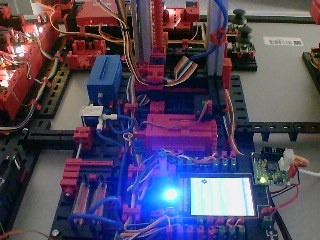
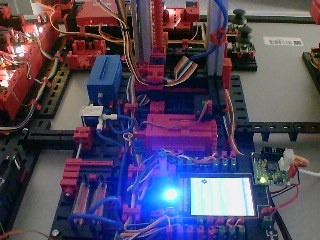
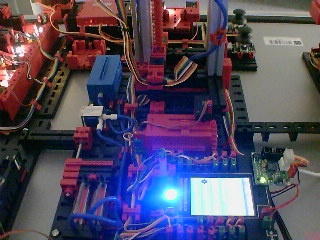
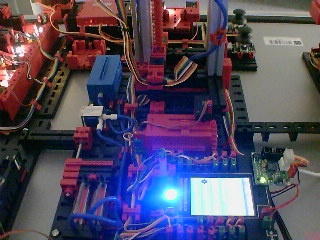

<MQTTErrorCode.MQTT_ERR_SUCCESS: 0>

In [26]:
client.loop_start()
time.sleep(1) # wait
client.loop_stop() #stop the loop

In [17]:
topic = "i/cam"
message='''{
    "data" : "data:image/jpeg;base64,/9j/4fn4RXhpZgAASUkqAAgAAAAMAAABBAABAAAAwA8AAAEBBAABAAAA0AsAAA8BAgAIAAAAngAAABABAgAJAAAApgAAABIBAwABAAAABgAAABoBBQABAAAA0gAAABsBBQABAAAA2gAAACgBAwABAAAAAgAAADEBAgAOAAAAsAAAADIBAgAUAAAAvgAAABMCAwABAAAAAQAAAGmHBAABAAAA4gAAALwCAABzYW1zdW5nAFNNLUc3ODBGAABHNzgwRlhYU0RGV0kzADIwMjM6MTE6MTEgMTY6NTY6MDcASAAAAAEAAABIAAAAAQAAABwAmoIFAAEAAAB4AgAAnYIFAAEAAABwAgAAIogDAAEAAAACAAAAJ4gDAAEAAADECQAAAJAHAAQAAAAwMjIwA5ACABQAAAA4AgAABJACABQAAABMAgAAEJACAAcAAABgAgAAEZACAAcAAABoAgAAAZIFAAEAAACAAgAAApIFAAEAAACIAgAABJIKAAEAAACQAgAABZIFAAEAAACYAgAAB5IDAAEAAAACAAAACZIDAAEAAAAAAAAACpIFAAEAAACoAgAAkJICAAQAAAAyMTIAkZICAAQAAAAyMTIAkpICAAQAAAAyMTIAAaADAAEAAAABAAAAAqAEAAEAAADADwAAA6AEAAEAAADQCwAAAqQDAAEAAAAAAAAAA6QDAAEAAAAAAAAABKQFAAEAAACgAgAABaQDAAEAAAAaAAAABqQDAAEAAAAAAAAAIKQCAAwAAACwAgAAAAAAADIwMjM6MTE6MTEgMTY6NTY6MDcAMjAyMzoxMToxMSAxNjo1NjowNwArMDE6MDAAACswMTowMAAAtAAAAGQAAAABAAAACAAAAAEAAAAIAAAAqQAAAGQAAAAAAAAAZAAAAKkAAABkAAAAswAAAGQAAAAcAgAAZAAAAFgxMkxMTkQwMUFNAAgAAAEEAAEAAAAAAgAAAQEEAAEAAACAAQAAAwEDAAEAAAAGAAAAGgEFAAEAAAAiAwAAGwEFAAEAAAAqAwAAKAEDAAEAAAACAAAAAQIEAAEAAAAyAwAAAgIEAAEAAAC+9gAAAAAAAEgAAAABAAAASAAAAAEAAAD/2P/AABEIAYACAAMBIgACEQEDEQH/2wCEAAQICAwMDBAQEBAUFBQUFBgYGBgYGBwcHBwcHBwgICAgICAgICQkJCQkJCQoKCgoKCgsLCwsLDAwMDA0NDQ4ODwBBAwMGBgYICAgICgoKCgoMDAwMDAwODg4ODg4OEBAQEBAQEBASEhISEhISFBQUFBQUFhYWFhYYGBgYGhoaHBweP/EAaIAAAEFAQEBAQEBAAAAAAAAAAABAgMEBQYHCAkKCxAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6AQADAQEBAQEBAQEBAAAAAAAAAQIDBAUGBwgJCgsRAAIBAgQEAwQHBQQEAAECdwABAgMRBAUhMQYSQVEHYXETIjKBCBRCkaGxwQkjM1LwFWJy0QoWJDThJfEXGBkaJicoKSo1Njc4OTpDREVGR0hJSlNUVVZXWFlaY2RlZmdoaWpzdHV2d3h5eoKDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uLj5OXm5+jp6vLz9PX29/j5+v/dAAQAwf/aAAwDAQACEQMRAD8A+ctN1bU9PLbPnRWKmPd5ij6AEnHuOO1b9vrNlczGSeKK3m3ZyoeMnI4YSDO1vUMNp719WTaZbSlSY8Fc4wSow3JBA6gnqDxXMRaLp1zAYmt1IU4wygOvfAZcHHoQefWurlZhzo+fjqV2Lp2srhp3mOcfKrKyA8MBmN8qOo6gcYr06xv0ObqZWlmjQeYGVBJDgYJVRtYD/gHP97Armb3wHPBKs1hOBtbcFkOCpHIwwGD+IH41xt9rst2qR6hCEBGVmSL5wOoKEkDB7kde1Te242r7HdyXa3qS28drK8gfKKqkPE2BmTc3C7vrknrnJrkNXsL+4jtoTNHI7MYwqptKhRkh24OFwCQVHNQWmtXGnCUWksUsTZc5OWTJ25BIXJI55B9639Ckhv7+R2iUOIcJCpZCBuAYyOBltwOSfm47Gr3ItYra4LpdKghuLIIUWNVmGGQBemSOVJ6YPXJrl4LVb23hFpHiVjJ50QZ1R1Q7lxzg44HXOTX0neaZbJpsjyxhm8piFkJO07ThUDkgbegI5OM9a8GXS4Ibyf7O9xGBClxC44AAGH3b8AjJHOeBwaiUS4yOb05r3TpPNijaN1B+8rfMufmDjHzBe+3DDryOn0pYeMLWYqlwht3YEgkgxPj+5IOD9Pw614Dqc+qF0jlKszBJRJApdx1C9GHXbzisazii4Tz1m6ssDlowScZB+YbJB05BDetQnYpq573/AGompTPLYNIJoVA+6oWRS2cEtxjjgnkZPHNbp1yXdGMoHQkyRODE5XBG5fvqwHJypwcde1eT6NeS6dulQK0OSGZgSBlvuO23fE46fMCh46ZzXe32p2upqIltyX/55yYVsY6pjO7pkMpGPUZrZMxcVcw/F1ybi6gsmOd3zvtXGEGTjnJ6rk8gcDipPCGvSLHHbTLlS2yB+hbnJViTjgHIPfGOuK5LTLi7SU3bRTyQr8hkJTcWbA3FjwygrjIIAHU9a6KFvJiu/tKOu7LgZO9FBO0DjGMqCGUZUlScjpKeppZWPo6Tofpx9e1LFKJEVxnDKGGeOCM8ivKrbWXSKVblklkidQ5iI2lJNuxhkjO7J4657V1Ph9nawiLHPzSAH2EjBce2MYrrOOx2mazLizhmKs6g7eR6g8jORz0NWpJQgyenf29zSRTJJGsiMCrAEH69KZJnYFs5fJ8t9qv1O1vuq2euDwrZz2PABrT85SM8gcjkEfzqG5nhRSsrABvlwf4s8YA6nPTArlUupZTJbbf9WQGkfk7WBKttBBzjgnI+YE4xnGZaPFdTcaPqJvLZ1w53S2+du4dCVxwT1bHbORxXfyeKrJ0RlkYo7q3+rYlSpDeXwPvNj5evfngVYvtIs4ZllIkkdlJGArHKLwQuNmCCeowTjAzXiSvdaJdi6jgl+zsfnR02gZbpnHB7ggY5wMisL2Oi1z2vU9Tihura9VZlUDypt0EqDynOQSWQAbHwevIJrttP1K1nGEniZmeQhQ6liu8hSFznlQDWOuq2GrW7QxMz+cjqRtYbRjB3EjA25HQnqMZql4dgiudORLiJHkhLW8gZQ2DEduBkdCuD+NaGZ6DcW5dNp/vK3pyrBh2PpU+8jqrY9QAR+QO79K4u50tI12W0s0DuCECOxQEDqUbcgUd8Ae3OKc19d2QUXcfnJjmeFemO7xZJH1UkewrS5B1MN3DJnDgEAkhvlYAdcq2GHryBWbJqUCgMd+w9JNjbeenvg/3gNvvWe0ljqHlMDHNGdw3DnOMHHqOmfwrqIQXhjLZYlFzkdeOpHr60gKKzoyB1dWU9CCCPTqPep4nWRQynIP8AnB9DXILZG1uBGkjLFOWIHB2yAZZfmB4dQT65DevHUPaxs4YqN3Zhww/Ec1JZiLILWSUM37s4cZOSCxO4DPbPOPesme3kebejAsAA4xwehIJJwMjgYGQKsajMI2jikcFpSqR56t843AgccDntxxWxH5cAVAdqZ2qDkbWzjGT1BPT/AAPEFlGeWG5Ty5FZTwwDA5BHIYFc4IPQ5rntIb7GqWkjq6gnypgRhsnJRuTh8k4HRh05GK9CCHcT9P0zVW9tYZ4yssayAjowB/InofepGQz3UNuu6WRI19WIFeO3vjm2X5bWJpyP4j8iD8Tz+leVeLLNop45t7SJIu0Fgd67cfKxPXgjnrxzk8nitJYb3jPTqK55SsbKJ1d/NeXk3mXEoUOuwiLIGBlgCT9WqrbQwwbljXGeCercjpmtCe3Hlsqls8Ec5xjpiseK4jRcnO5icrgls8Dj8q4XI7LFvzPs4G5tyjv/ABDnjp1qH+0PLZ24AzjPXiqTs8rBGQoBknBDN7daaYbZEDr85Aycj9eeh/CsGzeKGtJDLgdS3I/X6ehrq3liAQ5UEgEDOSR/d4/xrzef97KrKqjgYA479/c1PIwEvHICjgZOMfWixrFlq5u5N6scKyknjnGRgfX8aonUJScg55B5HPHbGajW3mmY4H3+7cck9QBz16V2kHha4wGKsPVnIVQPUDqTT0E/I5OaXzGC4CAj+IYPckkkdPpVtLIy5KSoxUDg8Hjtk813UOgSNM6yOcqR84AwVIBIAPHtVeKC1jlB8pmwAWD5JXHDKFUYYYBIJpBbucFaqdysyvsU5x5ZI59wO3Bq7PfPIQu7bHkruweR39817/f6jJHbloYxtAJy5CjH8OF6nPYcdq8kurO4ESq5LMzZQFByxOSfpyxJPAFIaehnX0FhDBuilSRiQdoxyDxjIJIxWxplxYtEVLZd2JEfzADHQAn0+tc4NEkdJHSN49iklpBhW78cfj7CrOlW9heI0c3yylvlIbGc46Z4zntitDG7Pb4JLlgWRVKnH3jhvcADg/iRWMGZrWdWdt3lyNjAXIbODjk8dOGrnP7EvLFCbe9Cr12uBj+oz+FYM82qwI32hPNidCMjbgAjrlRkde4xUWKbPWUtY7dh5aKFZhnHUE/zBP5da1phuKLnGSCceg5/Ing/WuHsNXinjGJVDEcxsec/7LHn37/hWzYX0d0u9TnaNpHcH+L8OmKRVyPUdHtbs5dcN/fXg/4H8RXlT6fqWnFjEfMizkqOQR7r1B9xXuqsScYOPXj/APXV1sjBFTcLHjttqtjeIEkRYnHADdDkjOGx/PFewr8uABgDpXnOoaDbXT/KPLc8llHH4joST9DXIlNW0vO0iaIdjlh+X3l/DiixVz1o6daFmZoI2ZiSSUBJP41pBFQAKAABgADAFcDp/iGC6YRkGNz0BOQT7H/HFd6M1DQHgOoobDU1lGdjtuOPQn5x/XHuK9vReK5TXtPNxbEqMvH8y+/qPxH6gVl+GNQ86DyWb54+nqU7fl0/KrewHpa1Z3VABTsVzGp6LJqkUcjxM6K4AI3HaCD354wO+DSXE9so8xUcsM4eKF2PzdcFUIOe/avKNF+0Tasz3VsEIibZkcKysgyu7OOvavYb29aMMNrABSWf7xIAz8ijJJ7cjjrg9K+wTufLSVjy2fU7i8mFq/7jDZYMpZpOM7cKSoCgguCxPIBHY6lwz3EQTzTPzhhHAo5xn5hIfl9vmHWuQk1O1lhDyW7JsmlVJC4ba0hzk9SD0649jWxZos6rFNuFupQiSMOFm2gKNx/hXrkk4Y85A6sLHz/LpQmupVgVvLXA3qAckYDFQDtbB6hT7itJ7S4s3NzcQ/aYeB58cjBkPTIYYKsDwQwGOlfXl15M8T2zQv5fT7m0DBHQZGAPXj2rxaOUwSyw20TC4WQIH3ART5HBlWRhknkHAzkHB7Vzch0c5c0nV+VeBkvEUcjAju0GCOV4EmM9eCc1R1bUYJ5bW5gdCLZwjpIhDRiTauWQkFtrYPpnoaoXvhiOc7kjNhd5+Ubv3Mjdf3bDofYc+x6149fXdxF5trexpK6jAc4MiHHGHXqBxwf0obEkfR0UH2ORpZ9qbnC7goT5i2S2BuxkgDqetbWv20FzbIk8ET3EinY65ZQFA3OWADBFznv2rjdF1O+ltxPDJHdmFfmjlXbMrY52MoO7PQEjPbNbltrNnJqJlu0a3GxUHmr8pkV2JAcZQ44zyMkD0rUyPGBY3elzxh1ZopRh8qSkiBuC6nkDvh8HqORUt7DHJqCxwqkWSilU+UBjwSgOByMHANfR2r6nYOGc3UXk7QspQhmZS3IXGc56HA4ByMV5PZ+FYb2eWOUvFIi7srzgttKA5/urgHPLEk5rilB9Gd0ZrqjuVtda0xNgCX9vyCpASUD0AJII9uc9OK89tjZyXMa28gjkTd5Qk3LJkkkwS5YevyNg9MHJHPQQ63qWhyLBqKmaAnCTLyfz74/unn0Jrv7rS9M15GkTDFTsE6HDAgBhj1xu6N0NdSORnz1HayrcIFiMixFmjWRVy6jmSMYAz/EUHB4PHavovwjeQS6bCsW4bQ+Ff7wXe2DnHzDtkcZ4615fd211pRcX3+kWzNuW6jT95C/ADnjjJwT1yeeSSDR0PU4ntrhDJskt2ZoJEz8olfDELxlA3zEHI2kA9KEU9T6WN0PN8oqwbGRkfKRkdG6Z5GR1rkdW82NFMHeRNy/Lt+/g7d3APU9hxXERWt5Lc/vmjZlX/UniN14y8WeC2eGyeCcE4IqYPNFfrCyBopGZo+CiIyhgVwUZSxLA5243cZJNamFj0790UWZCGTOQeTuOCvzE9BgkEnofpg4NsGju1jYIUcSJ77ziXDA9sbwvHAGOc1VkDwOStuJBKpDKpEbkgdRnGcjO4HaOhHJOc2e6Myow5YEOu4mOVWRiyhlKhgrfMgI4Oe1UxHc3FpHll+6ZgVBIyFbGVwQMDpkZPJAx1ps8EeoQoJBiORc7c8kkdD9PTnn6VmPqgnIiSJ3LY3cBSFIUh854IyOR35HasXS5JzcCOSdxNFk+Syphl3EkqQOTsZSSCcd+9IR4zFpWo6Hfs9uRKo2BlwQWjfvjnOGBGRkg445rt9A8QQSavKqHCXahgPSZODj0DLyc9xXW+JyDCZoWaOWOPespVthUkEqSfl3cBgp53KPcV8/a3pb75buKN18twGw27zCM75VK4wOnQAYyeOlctrbHYnfc+x2i2zB1YkjgqTwFbrjuOQD+HavOpdatrp/LD/xsvl7S+8BeW4yuASOGOMcnqMa+i6zFexGdQxwuCSAGIXB5xgcbsE8evANdDdwwktwAzhUJII3KzYxk9Tzxjviuo5TyFNK3vFJDBcQSb2Hm7ozlQjBQULkMMYHOO4BrvYNekiyL2FoxyPOVW8s4JB3Dkxn1zlf9qi7EsF7Dt3SbhJtXJy2cFvYbMDn+6cDJrONldyeUquyyK7OwJKwqr5G07CGJAOVGc92IGKks6XUpEksjPCwkEe2ZCpDBvLO4gEf3gCv410+VYAqcg8g+oNfMmoaJe6VGz2lxI24hnVQu18nkiPB249efeu38J3cs9hGiOVkhwsiSZbI6oRlsqCmMds9BUXHY7GWDfqcL7c+VC5DehchcfiP5VLflCkykc+WzZOMKV6N/npir9vMJbiYDgrHEGGc4bMpI+o4P0IqvqjpFAzuwUFXTcf8AaU/1A4oBGqoMfyseM8H+h+n8vpWWk8xzuTgk4xwcA9cZJx0/wry7VvGMIDpCjuc8MRhR7juT3HAry671281DCOwUH+EcDrzwOTx6muZzR1KDOq1+S0ubKRVkBm88uuTkY3kdRwBtJ9yRXi0doYnDR/M3cdB+B9a149is6EgnqB1I74/r+NbCQyTBgiOeOwJ/XpXmSmd0YGOhabKyvs9UHH59yPpxVNgkLfKAEJ2ke/YitiPRLmZh5nyBeC5IJBH+6Tj65xXUPozQZ3j7SpGMABZOfRTwfwINZ2NLnm1xFEmWOVBPXGPwAx/KquScEDdGSPm2lVOeCMn3613sUzzKtusP+kBwjmRcP5Z/jG48HGM4zg/hXuEMDRoI12ogAAC5PA6cnj9KdiWzwRPC92wMisnIyFDZJ78Hp9O1dnY6PZyQsySuxPysCBlWHUEABgR9a7ltPMZ3REEcl424Vj6jHCt74IPcd6xLSBJJJTGWhlRj2G4q2G+dejLliAfbg1QXIbe5eHEDRIjg5V+iuOmQBk7h0IHr71J/pjxElkxkjYBuJGem4kDJ9xx3rl9R1aYTJEyfvUO9THyCyg7cDkqG6MOoBPbmu3huYJWWYOpJBAwe2Cc465pWKuco8LvE74clZV65OdqqxBQYAA6cZ6e9Z8RaW4cRbSWQZUYwvYhueMjqMEntXqtiC8IkY58wls4xlT9047fLjNZkthJ9peaMqD5arhuhOScnvxxjFSVc57TEuDAkLwxFocIwLnPA4/gYdMGmzxXNzctHgI6JkH767WyATkLk7h6cAH1qvbyakbuRDHFlFGJAWCMOuGB3FuSeRgg5561tW9xL9vcSRmNngXGSCDsZs7SP98dcH2pME7CkySx+WwID5VipPY7WIwAecYB6DOa4uTw/HNLNGrbFjb5cD5kYqjDB67cknH5EV6mGcyMD8ufu8fwj6/XpTY2I3MFLZPJ46DgY9R/kUIlnmi6pLbA218BlgwSUDKuMd/f/ACa9KjZSCoGMMfpg8jH51QuYIbtHikUFTyPbsCO4NeRWt9daYo3o00DKrA/xJkDAPbjp6fypiOu1Dw7azuXwYz/sYxz3I6fliuIl0K/tM+TIsi54GBn8myPyNexx6hbzQiWOQMp4465PYjt+NaPPOaq5VjxG21x7UrHcQtGexAP/AKCeD9Qa9Xtb2O4j3ocirNxbRToUkQOvof6e9eKNp19psrPbgyR/nkejKOfxFKwrnt3cn1wakAzXA6b4itbjCyERP/tHj8D/AI4r0nHzVizRHj2vaCJB51uhLk/MFIAPvg45+lZemeI2RkguhwMrvOQQe27+RP517ewxXC6pokF3lsbZOPmHf6jv/OqTCx1wx1HIrwPUIjpWopMg+RjuAHoeHX9ePqKo/ar7SX8knKZBAIypGedpPTPT+ldRq91BqFkHiPzRncVP3gOh49O+faqSsS2exoyuFZTlWAIPsanPXivN/DN15tpsPWI7f+Ankf1H4V6JXO0bJmRp2oXP9o21vM8ayRxsr748ElgpIUhyDkDOQB7jNe6tJA20My4xvU7sdOpU+3cjoDz1r4TtrGaZpIvPx5K+ZndvjHzKpIIzwAc5GeBV9dRlLQW95IDbRyE/u1UnHIyvA3Ic84zkH6V9Mpnz0oH1RcQDUZFC/wCqyrMT/wAtVzwGHdDyFyMtychR82qIZZLmRCB5a8sSDgjbhYsbuR8xY9hxkHNdFYvbyRI8Dq0ZAAKYxxx26fTtVe0Rl85chiJiS3QnKqRkY7KQvHpXYcpyl/FcxRMsSsI2XG0BWeMDPKndjHoo3H06Yryg2upRWzvbSxzKvmgOwbkN1SNixEoz0LKBkcHtXrd415JJNEZVVMqYkQFZW+X5gWPRc91GcdxXnuqX1zpMDBGijXa+wCL50J24UDzGG3JJBIIH3eBismUjzOTWLy9ZLK5ml2NLslZkjQ4GDtAxndkcfNk5HFdreWWiWrEyafMyNtCn99y2CcZJzuPHA9+/FYenW2mhI/tcsEscyuZCzjes3GTuyDjGenfH1qu+o24gls4Y5rqJSds0aYZWByMsBhwOoJAI7ZGKx9TpOV1PToLa8xp87I+4L5YLgrlSSNzAH2xg/WvStH8afYYhZ6jasgRQowmOMcBkOOvqOvpXN2Ms7qbwWlxM6LtDlFOCu5gxOc7lJHJB3Ae9et6tqej6hEq39vcwgcq0kMilSfRlB/wqUNkNz4a0zVEilhjWJJXI3wnkgK55AOwcgZGCe2QaLTSdU0Z5Ps0i3auA7xy5V2x8p2PkjIAHXjpXhxB0yUy6XqCTRhg5jLYPcfMpwG44OMEenevarXxtbX0DhgYLpY22AkbS+042k8HnHDYq00Q0/kem6ZqlrrFvIpjxglJYJQNy8/xKfXqD/UV5RPp914dlNxZhprRsedCeWXHcEDOMdDzjvxzXarp66lbwX0e61vCvyvxkkZBVwOGU47jOKoaRdmOZ7a8JhuZGLYZt0cpJ/wCWZJxgcALww9T2pkI1bfVNNuYfPQh1bAO75pUJznfu3YX3HAHPTmvnp7cWkjX9iUZVXMkRHyspYhsYJGPukjIxnp2r0S98OzQ3ElzphHmIMyRHGxgeqqCScnuDwexzXNRTJqjGOMpBKYZ1lhKsiZOzOOeDxk8Z4OQal+ZovI7GPxDpV/YCEkxSouFDnDo2D86v39/XoRg1F4ZvGvJ2t7sAtHEwQk5L733kgjgMFCkAc4GRXhNvZySTrb3EWNxZA653I6bgcY652kbcE4AKgnr0dmE0aby7uMyRviVLiFjuXBC7xzggMO/r0IOCuYfKfZsfzSBZCd6fN2AcY27sAe+GHZvYjMt5ZW9ygSeJJF5wHXOOOx6g47iuMi1ZJoFkLrI8Q85WQcSxjh2UZ4bYSrL1VscdK9DmdIgxdlVQOSTgfXNdCOVnhgs7uzupI7d0IjKm3WQnO11GYi+cgHYQuQwO0cg4J6sNbTzeY8X+uXZKjr86SpgqCOoYKW5HYAqcVYkitBdP5pGJIRkyMcYjduQxPT94MEHH415f4iuY9MaCfzCZonBUn/lvH91lZum5VY4J9cjkkCSj0P7VJaS4Zy6SDYqO2Aj4GBuYFiGGfU56g5483sdGnjumspcQJJI08extwKbCrqhboQWGQVztzjpXb6xAUgMkiq4YRhQzKPm3ZUbzsIxxhuSADXF2upXeq24njhLTW7RyLtMZPy8qM71+8C4b5eSSAOKQ0ef4/sLWzFI7i2Zg3ylhhH4B467Tw3HOOnSvpvU45PJiXzNweWHZNgFlYyKQTjCsCMgcDsDnOa868TRWl6+nXG7NvOXgZhwT5gzH16FXXnPQ8VieGbh4xPo1ztWWP54HPRsEOn1wQGHtx2rNaFvU9ea7jSaFd+9/O2n1OY5MYA4AzwcccZNdUqsI2yMk5LYOMk9h06DgcjoK5jUm86G3uox/q5A/PVcgo2QOpTcSfQrXN3/ie2RDGhaSV/lAhwxB/iPPGARx1rZsySO0EST7lbc67WQk8ZBY/LxjlfXsfevB/EVsLK6hubeZIJwWikAHDcEoWVez4APHBI9K6E3eq3HzKY7ONh90ktI3GQcjocZ54PrmvJr2C23sqOVdlO95lO8OuCPQZyTzyDjrXE5Haonb2fie4nMxtoFRjsMjyMoCnbjr3HHBwfpXE6ks11Ivm3JmJOcRqSMDnhj74+6uOa5u53XcyTIC0pX5gT/ErDcGGAMfMCPwr1nTrr7WVljVI1Vdh4PysT8y44x0X8K4pNs7oxSPOZLCSJEcRMVbG44PGO5zzj1GMV0c/h3MZaSVI3ydgBwDxwCffkcV6SluXeSKRy646DCjkng4+bke+Ky7URWTNEcLjbtxySrHAySMnB4PoME9a57GrZ57NYWsMCS28bSOrfebdwSDndnjIxggDgmu90t523R7k+U5Jwf4sn5QcfLnpnt6067ngRZgCu2ZGLgkZDkbFOPRsbT7gepq8sixSbDlRG6jpnMb52dPRhj8M960sZXNQWqFyGZmOASM49hwuAenfNV0eGD5Y9mMnKgjj6ehPoePpV9f3km5ScAFe46kZ/KraQom4qANxycdz60WHc5S5s4byT5uV2qySKcMjHdnDDn+Hvnng1W+03tiMXA8+EH/AFyj51H+2g6geq/iK6d4xA7SAfKwG8DtjPzAfidw/H66ytkAggg9xUDKcE8UyB4nV1PQqcisKe0je5ychjGCrLwylGOSD77xx0OORXO39qbF2ubQYYnMkXO2QeoA+63v09aQa9BM8ZCyKVcBgRypb5MMM56txxjIqgEkmBDLdxb0H/LYKQB6EjqmPVSQOpx0rk7uwa0w0eZoGO4oRiVSRglcgbgR14z368169NfQoFO4OXyFVfmLewAz+PYdyK486fdNlo5BaKc/u8BwffkhFPsv50Aanh++WWzhQsCyoF/75GCCOxGPxHNduBXzALJiWnhDjaSPMgzyQTyUJJx9CwIHOM5r0iy1xljBlIZf+eqZZc/7an50I79s96zaLO5+yiOfevG4HIHAyTkn3J9a5zWHjfYm8rKjeYm1WdhxjkKCdp75xmtafUVSPzAAwOAhByrEkBRnsCTyeg9auW1ssCbQcsTuduhZj1J/oOw4qSTj4NZQxj7Sj28nq6sEJHcMR09jiu3tbiGWP906uq/LlTnkAfr3pZGx1bA9xnrXCXtu1kxubZFH/PWMcK49QOzj9aBmvfQOzB0JUlSvr7g4749/XtWNZXYi/dyjB5UnGAx4IAGT2PTv2zWlBq1vcxh495+iMcH0O0ED8TXDa3qYj2ExHaSFbLLnjlSADnI5weOaBmZq+iPEklza5TKt5kY/uH0H6kfl0r1DTrxbyBJV6kfMPRu4/wA9q5qw8RW0rJGXJLHAJGD9GHr7jI+lc2jHStQdFwIJx8uTgK3/ANbp9CPSqEj2jGKhK4NLDMkyK6HIYZrMupCyvGuQSduQcEDAJIPsD+dYG1jntU0KC8BbGyXGAw7+m4d/5159pmp3GnzfZLoHZkAH+7noQe6/yr24uowF4xwB7V414tiMghkVchdysfrjAP61a7EM9mfio0OSa4LRL8T2iKT88YCkew4B/Kuo8z3rOxoXbmKOVCjqGX0NeI3/AIceImS2Ykcnb/EPYHv9P5166JWNRlx601oJnhuhagtnct5uQrLtPHQg8Z/UV72tyjgMpBB6EHP614R4ihCXKv2kXn6jg/pisC2u7qwfIVthPIIO1voT/MVs1cyvY9x8YaHMjPcK7uJGww44yABwAPQc/nXpGn6fa/2TBH5AZpowFEozkuM8+gAGTjGAvFen297BLHHKjhkcBlPsf5f415lBYn+0xdqJFhQttUv8rNh0ZghPyqM8Y69QMGvoWjwk+hzt34eudLZp9KnKgDLwPlg3T7uQck4AHf0ParGia8k91KJJTaynG63kxgtgcqWAPttyDW1qHiWOJWDFmDZdZLUq5VFI5cE/KR0JIKn07V8ya1qsF5cNOIGCuAMkYYsoIVtwzzjqBgHAzSbsaJXPo3VtZt23uIGlKDaw3hE5PAbdg7s4IAB456c14vNP/aN1DbvmVzMu2OA/Js2ksMvzuz1JOAMmsnRfE89gQHj80Ku1NxIK5646jn6ZqrpN3eJffaLW0LyDdtRVdgAcg9Dnv61zOdzeMNz13V9MayieSaNJ38tQMoFjiySMIxxuPAySQ5xnvXnen3Yh04mJVd5GZCM5dWbIBA24PDDAHPUfSxrGsa1fubea3wSF/dCM565zgkk/U8Cse80nV4RmdDGvB4xgH+HOzOORxnvVOXYhR7nb6f4g1CzilMsSSLcbidr4ZZMEMWQAsDgcjbjjrX0ZpuuW9/bHyo5GUDa2GQEcdT86sOnoD6Cvim40u8eEyiZpVXG7DcgknAxnOSST+da7aAir5gvAVPBO3aUfIAWRSxZck9cH1pqQOJ1uoRR3t2FdFit/PVQZEIk4HId/vY68Zz0BIPNdJqfgq1kjgktdyI7KGOS4AfCoQCc4DEbvm4HPOKwp/AM4jWa2ulmU5bkFcj1VgWBz+A965OXQlgjVZbySBi4UpJGQMbgrFWVyjbevWot3RpfsyeHWNZ0B1t32mPcSu9SUIPcEYbHfHbniuz1CXUNXiEj2cFxDGeWgmYdgTtDHOcexIORXlOoWdhCVC6kZuoOIiSMHHHzYOee9cy2nXSK0qRTeUvO8xsoOe/cfrU3CyPZdL8XXWmuI5kkkgOCu4qZFXt8w4bjscH6Vka5qmnTSpeWcjpcBtzhlYFyT1wSy8dxnBHGK8qhtEdFbzAXYlREgZpM9uMAc9iCa9jsfBOLc3F/OLVccA4zz03Z4H+6OfpSu3oGiOWTVbWSeRpFlG9llDRkbo5R/EoJww4BwenT3rpdR1+yuvJuFjKTrkSoRmNi33iB05xk9Nw4NYU3hpiGlikb7MAT50kZUvjqI0zubjoTge9ZsmgJGHL3GNuw5K/KyMQCytkZKjnAznpnNF2OyJft62M3mWMuF3lvL+barDO10LAHBBwQeeoOQa+iPDvjax+xxx3UnlSxLsPysVKjhSCM/w4Bz3rwQ+E7jy2uEEjWy/elMeDjJBZYy24qO5OOOccV0TfD+9+dopYnjCB0fOBJkZAGCQOB1JxyPwab7ENI9ak8SWLXkbJeqVcTKSyqAittYZyBnBTA3Z680x9U0fcyI0UiSgI3mNhcFsk5wWJPfjjjGBXzH/Yd8YklWCR0bgFFLc85UgcgjBzxxXNOm0kHgjqDwR+FU6nkRyeZ9ZXLyW4VI7iG5swc+SXBYADlVduSB2Vuo4zzXAHxBEmqm7VWEUo2Nj5XGMYc7ckEHsRyOxryqy0e4u3CwhHY9t6bvXOM9K7c+CtZAyIM9Bw6H+vas3J9jVRS6nWahrFrNb3ltGyLuxcxnPyrMMMwQ+jEblBwQWYEcVzuuX9vexwzLIiXCKpVg208EkqR6jjaeOh9a4abRbmNpkZQskY3MjZVmTuygj5gOpxzisO2tJJziMBsYyM88nA/MnFZuTNIxR6rZ67Hc27xXs0pBdyEyQh38nO0ZJ3En5jWrot5bxB2byohtVVLN1xksce5x36AV5nHo100ZkVQU3AFtwwCSBzzkYzzkcVdTw7qDqzLHu2sVIDDOVODgZ9a5m2dNkezR6vYqvl/aRgAgYBA4xjBHPfHXtTWm0/5JFlVSrDJ3EnByuQWycYOcH09q8Qk0S9jTcybVJUZLLnLHAGM+vWr0mg3SruPqRnjBx79Kgo1NZuBFcrJFIhLJhmVgQ2eMkdjjj8Aan03U1hcuCPLlZY5Y8jIG1QHA+u4N7VzcmgXiRtKY/lXcWO5eNpIY9e2DVS10u8nBMUTPg4OMcEcHPNUTY+nrO6tghJlUM2RywyAOB1/Eg1y9y0ZmR/MC7RtkKuc7WwGxzwQcHI5x1r50aOTBZsgBtpz2PofStRLC6bG2JzxngZ46ZyO3vUmh9C34tHjZUmi6Y5YMWBGDuJP5HnFcmupRG3PmTo1woK5H8aEDAPbI/Rh6Hnx57GZV3sMLkjcWUDIJB6n1FUoIpZWPlq0hHXaCcD3IpkH09putWIgRXnUOqgPuzy2OTkjnJrpV1azIJNxFj3YD+dfIK2F1JhlQkEkDGOSOSBzzWmdFvyoYQSMD0KgN/ImgZ9Xfbo5B8kiE5HKurDHr1znHOPWuctb/AGXz2+GCEbkJGAWwCQvA68kj1BPevm2TS75F+aCYD3RsfyrF8xlIyTnqP8RSA+wNXV2iADFBvUuemUBywz2zXhsGmpeCWRJfKEbAqWUlzjGAcsPl4GM5/CvO2vZipUuWU4yCcj9a0YdUdGZtiksMHqM/rj9KBqx67pepx2rsLlFDP8onVQFIB4DAAbR78j1r07+1ITwDkbgpx2z3+hOBxXzoNaQxNGIoxu67tx6/8CrAEsAi27tzgjDHOSv90+w7VmanrV/c/Y5JEtxIRIc8BtqSHC53EYOfTsfrW1HoTeXmYLJJ/fQlX/77GP1/lXlEF9Am9CzNHIoBDM+VIyQV59T/AFrsV1ZTZqVEhbHz4kcfMByF+bHPX2HvQ2Bzk6zaZcKUMrRqSWVxlQSCOSvGSCcV2Vh4mhZgj4iz035wPocfd+pGPp0xZtXsjZkIJVZg3yF3PzHqSS2PxriLmNQjKi74xgRliA4J7DHLDP0rQxZ9MJieMMJQ6n/nngDj3BJ/Wq7WicEclTlS+XIPTgk56e9fLqpLbtmUTRHGAYxs/HOOfzru47uykUb9RvF9ixH/AKCp/nU2GdRfxnT5zdxKNp4mQHqOzgY6jvXW2TpcBZ32knOzj7q54K55y3Unr2rwq/nseVSa4kODyXbH64/lXEn7gIfBB4Xnj3BxgU7BzH05d6TZXGQ0Q3DuMg/mMZrzDUNEljTasxZAeEcZx7hun8q4y01e6hbIlYjuGO4frT7vVZ7nIaQ7f7o4H4460aiujpdK15ICRIpUEDO3kZAABA68jr16Cumi8QWm93beGb/Z7Dp3/E14aOtWB0q7E3PYn8UQ87I3P1wB/M1x93q1xfZjSP5TjhQWPHqf/rVhQzKoA8pGP+0Af6V0SaxPGMLGgHoAQKzKRzTWt1B8xjkTH8XPH4it2x1yWEbZCZF9SfmH0J61MdeuTwVXH4/41x8rB23bQvsOKr1Bn0LBeRyqHVgQR/nI9alMoz3P4V89QXEkDbkbHqOx+tdOutTjoqfkf8a52jZSOs8QRebbbscoQfwPB/z7VHpcvn2io2CBlCCM8dv0rirnVZ5Y2jYLtPoCP6msiG5eLIRyuevSmloS3qeh3N+9nLKkKy2wLMJIPM+Rux8s4469j34xXRr4ytPLVTbkFD8p+T5eMcIu0H2BJ9TXrOmeFNMDyGaNppA2d0z7zgjrxhcE5wcZ/EV3o0rT7aLEdvbx4HDGNSc9skjP5mvo7M8TmR872XjGwimkcRvHvIyQFIwoyMrnkliQSCvy4x0rsZPG+lTxAyecOu6MLnJwRw2eB9CPTpXJy+KlMpit4E+aTrJ8wLHIP3MZXoBj0rotCso7lpmMEYkb5RKw8lQFUblhTG47WB3H5T3J7VKb8htLzPObnxFY3dxHNcxucuC6qo+RFywVTkFizY3MSOMgAV7FZeNLLykWC0unIQZEcOQDjnnd61xsWjC0svOljm8xzvE8Z+ZVcDiQZwFH3jnK+pFdSfFd7bAjEU0Z4im2PFHIQSpBYkKpB9ODjg0Il6iReJ9RkWTbpVy4f7vyEDYc4/hOcg1y994nu4rfZNp0kZ+RC0sjchckA5XJzk5PpXs51e8t7csbfaSoaJEAkHOMoSCOM5wR0Hpjn5713UNQu12T2xQk5OclOmQUZc+nqQM8nmm35lJeR09p4puTamOPTN8ZHlkrLlc4/wB3jr/KuEa+1G8uCLeyIuIypkZCSSEOVD84PIHX5sjg1i6VLOWaO3aVIpCpchSxALFSy4Bx0wWzkc19Z+HGso0kjh2rlsAgqQ4UcDcpIzknIznOTis43fU0lofP9qupmSa2n1EWZ2bymM7t2Se4IYZw3O4+h61Y07wtaSTXAvJ3Zowp5fGQxYhlJGWBA9ucjr09I8Xa5pZP2S4SSSVCGXYOQew3A8Eg88dO1eJNd39wqYuPLCsYwqEyXJRiARtQAHG3OCVPWqaITZ2epRaLaREQK/2rayssJK7eMHcGyqr3yRzUEEeo6tDGZZ7mcMPuW8aog46PM4VM84IG6otB0iGYGS0tfNIY4luWABOeCFBbH4qfrXvemtfrpkDme1hjWCPkxsxA2jGWaVFH5YpCbPnK88J6nZyfbLaARiLBVRKJHyOpxtGfp+VdT4d1Cyvn33MkjXwxjztrL/2yBARfxGR711jTXN6HjW5urk5G3yESCLvgmXGccY+VjntmvOrzwSoBjD5uiF2wwhnVf9qR25UHruO3HYGptbYL33Pa7jXraCRzaxNNc4G9AS2FHdnBZRjPbJORxXmWpRxzL9pvMxspdPJaIrGgdSo27h8zbtpYkg45wOKxItD8RaMVkjjjuEQH5R8+MnJwDtbORngVvweMLG6hltL5Hh8xGDZ5G44HGBxnk8jg961v30I5e2p6Jp3iNHsLN3kjDsERh5ig7s7SzBlOPulvpWBPfW2kupa5jktWYlViKnynOSVKBiTGTyOfkbtg1wXhzxbaWkQFxK29HkGxQzKQzbtykcZyT+FW73xldXc2yzgeVHD4EifeUD5gOnBHJHOKrmDl1Pcrd41umWA7Bdh5AccpcIoJyOnzJ82Oh2nrmp9R0y3v/MN0qGNQqjcgyrZPRh8x3ZGADzkDGc18RwavqNnJD/AAyyqsm4gLtZFOOoXaxH/6q9kv9R8RAx3Tm2RFCgsnKKXyqlwepHYjIBPvUqRTj5mzc/DuJkMkUkkLZyqkbwvTAJGGyTySCcZxzjNc9HdeJtJ3biLhFBZgzB8AcE9Q49/TvXWTabrcyoZNWMcuDhFiKqSTjG5Tg57cE+1eXarousW8Ya7N0zFiA0cnmIwYjK4GGUkDvway22uUvOxp6n4tg1WJIrqAwurgrIpLbOxI4DD1x36V44CsEzYlLDDDfGSpbI4PPv1Br1fTfCpu0NzNKzorHzI0bdKgGD8xwfyHrnPXFvXPBBtYUuIJcowyyv8Awjrnd3GOeRnrXPK71OmNlocoNZhUSJJM5LoELRBdpXGCSpHXHoTx0INXtH8QQW1uEm+0M2STtzjHbGCOnfPXvXIxzTafuikiU7uQDgkdRkH8K6zQ9dggkAkyq+UVJwSSQ2V6fVvzrjOsu3viKykcSRS3CNlQwbpgMp77h0B9/wAK6WHXLKZvMa8ZWCkBSABj3+Tkn611qta3i2+HWT94BjOQu1GfkZ68AHPrxWpdaNYPgtBEWGeiDn/GkM8MudVKRTQRzwlXV9ykHA3A7gpB28npj15rXsvEMdpdXACiRJiH/dkth8YY8jnPB9qq33h+MicxxBQiAoQxI4VmIPGM9B6YrGvdPa2jgw+75ioGMNiQZU7gPpjPOaAKuo6i9xNLKsMmGwFYA42g9wRtOfcZ96yIr67t7cIh8qCVsggBjg8HB/mOorVM0LEB4543Kk5kMhyecHHfHbgD1qOIR3bGOR40LYJKL945A4G4DcfQrnrimWy/aWVlFFHcTxvMsvAJJIRxy2VHJB5x1+6fUV7lHewqIjA0fltlDtGAG6rx/D3Bz3K185RCSO4FtI+6MMQmd20scFcbSCDz74Jrbl1CPcIrlI43j/jCZDHsGXHQjrx9KoyZ1zXS21xIET90W3sh4OCAd2Mdjz15APHy17mkqMAVIIx2PFfMUWshzK4I+dEAVvvJtyQVLZBwWJwT+Pau30bWIY8wkbF3YAx9xifu/wC63VTzgnb6VIHtDhWBBAIPY1lLHGQ8ZVdpAOMd2znjp2/Oo2uAoJJx7mvPru5xcnZKAzqgUgg7VyxY46HoMe/tmoKGw6PbNK0Mio+w5PyqpwwJHTn1BqS58OaXj7pj9xIR/wChEiuRvNXdpfLtFV3+XL8kDBJOSfr/ADqlcadFtae8dpmHYHao9gMj+YpFmPe6XpcROL3Htw3/AKCK4t4bLnFyTj/pk3+Ir3Ozt7AoskUMeD0O3J/XnNb+5FyQoHfgAVPMPlPmJ0C4wrkHoWTaD+JNW/s0jIpGCDlsKckDoS3+Ne5XMkcqlwRtCMC+SeD1C/4/zri7S3NvIrAASOcMmRnaxHXnt69+adxWPN2TaQM4+vf+lRCR1I56dM16nJZRSXWzbhdiseOvzHA9s1zzwIjstu7GQk/IBuXGTjOeAMepp3Jsc62oSuAjfOuRwfbNVleA4BUjPcHJrqJNOuUJZoFcEYwh24/DHX8K5qZYVOCkiED7pwf14P6VQHRn7A6YWPa3HJYknkZ7+ntXYRJYKoO2L8Rn+deNuF4xmpI4nb7gZj3wCcVDT7hdG/ql0srgBAqrnBxjP09qxIreWRSUQsAO3+eaezyocHcPY5/rWlHq08YABA/AYqwCys455CvnbCMYyvXjkYyOQa1rHS0leWORiHTn5SMEHuOKx5r+ObmWFS395SVP/wBf8ags79oJd688Ywxzx9aTuJWPQxoEBHErg/gagk0JhysxP1X/AOuK0LbV4JCAcoffp+Y/riumLg4wR+Fct2dFkeUvpE39781b+Y3VXTSZmP34/wDvo/4V7N2qjIVGA3enzMjlPH7mx8ltpdScZAwcn6cGs9IJe0bn8DXoHlKNQ4A4iHTjqTz/AErtHhJH3mB9sf1FPmFY8Pa0n6+S4H+6azBGem05/GvfD54wMg/8BOf/AEIVgPdOVyQhxxk5B/Dg0KQ+U+hpo0LSKJYopiWUbwAXXkFGAIOOVOevIOPXmHjjuhPDJNKscC7PKklLNIdu7cQMFlXovPzEZPpXNnwzPIySLNHDIFYttkZsDjCkfLhexxu+prQj0+0NokcHlI8ci8SrG6kbwchwASrN0OSD93g19TqeBoaPh3T90bvEsaM+5YiEADLxjOD82O44JrH1nw3cg2luHHkRmT5wArqrkFiw3YJ6hdoJ9q7SCTS3Vrd7a0WfBYJtjIb5mwQdvqORjI9MV0ekQ2i2xliD23PzqrZCnuMMGUD6AfnU8ulh82tzx3WLjUzdbEkmMCKMpEGLqMdSdmecfxE969BgiEVqpgacxiMZaNIEgI/iG2XG73J796dcpI12iyyW8uCfkK7N5blVaQFs7VAYqECnrg4ryrWtXtYpX8i1hU/dZ43Rwx3b+m0Ec5BOMEcHthPTUI66GhLcTRvM9k0dvDE37wu37ok87fKHmKSegKY54rhGF7J5i3Ty20bqMGRJNjZbgMcfKPrjOBmrtrqYubtZGUyXDODDHEnyxHHG3LBcjAyWyBjp1r1O70fxBdWmLiVOSQ8SAb3GVHL4KA98DHArHc2vY8Rt7q3SbNzJO7oESNYSmNvORu27cZPtnv7d/p3hGDUQJHnRNqZ8mCQPIfdmPyg5zwF9s1QuNOgs8NETG4AMkE7YzjBAWVem73OD3ArsLPxRYXQZJwjJgbXmbLJlfmDBVyQD0ZcHkZOeaSXcbfYvXnhy2shG0EMDqZ4RiTkvucJ95lcjnk84x/DW9LqNlZzGKaXyVcHgRxthwOGUKr9e+QDkLgda8k1LSXnkjFilw8CoZRjCISzZUorksFz3IJOOOOa9OtNKjSGbyUiEjoA0j3DPJk/dAxHwMDIAOOg+mxgeSS3TRTzXunypGSSrRucyS9Dny8Nt59xzxgV1OgC4nhilgSS5eEqpE3KR7QMqu4BVxwCV3Pjt6+tpZXaQ75rpgjDO6OONVwRyZQ6yfe/vAgD+IDv50sTae0txbut7FJKDcRuyHGCCsgIChSP4wVA9eBmpsyrncyXbl3N5cJGr4jcQMCNuTtDOSXXGTk7U4Jw3QV65aWcFrEI4ECJktheQSepzk5zXL6Vf2X+pX91P/HHIAkpJ6kj+LPquR0xXkV9qkWl3aQ6bvnY7i1shMijPUg8lDxkgcdOK1MT6Vzzwehx9CPWvmvxZd2mpBobWBbq4QMWkXAWJQOSzjhj6Lnr71xayXeqNO1zJ9mhRQ7xQKfmDc/Ps5YkYwTwe3pXenTpLK0M3kBwoRQkWPLcMR8wTOec/xFieD8vZN3RaVmfPj6bd6Zd+Xazb5TGoPlruBDZyvcEDbyf/AK9dFB4od5UEwEEiRuodl34dyhDcgFcbe+eDjvX0vepbG5tpmQEeVLGS4AKsuG2kEjBKeb9a8f1CzbUNYgs7iDYJEAEn8Som9+uDyw4PUDr16YNW2NlK5X0aD7Q0t7cI8ySLw0ThW2qCoRo9y7sAZIQk885qlHBYw2E0scayWsgdHLRnfBJ0V13D5kztJXJK54yMitybwrrGkbn06fzo2+9ER1+qHKt9QQfavO4vE89i+3yBCwIEkeCqtjsVwCOPXJFK/cdr7H1TZaehs47mzmMReMSIp+eLkZClCDtA6HYVPGa58Xs6ajF9oCCOKJnVoQ8kIJ+VmfHKcYAIBABJJrzHSPENlDdxxg7bOVyfKLBlimI6g4/1ZPbICk5I9PXdY8S22nXhaWYFlgAXA3HJfLdCAM4H5ZxXQjmsdzPb2d26TMFbC7WZW52sQVdXXBKhh1BwAWJ5FeX6xpsVjCYxeyeWwA8qVvMCjOMgcNtxkH5unPbFeH3fiG4vLgy2URh3Ah2GEV88HIx82cdcZ4rgRGskxF9JIWB6k/IfxHf1zXNKaOqMGervaz3Vj5bRrM8TMqurAE8nJwwGNw54Y84OK5ywj068tMT/ACTINruEZccnaxIGOQOd3fNdXZ3scEuQ3yTjI44Vxxj2DdvcfSuduLoafqRmUkRTcOMdD6/gefxNeWegcDPYz2qLcRyb4zyskZIxz0Pcfyrp7fxRewKPMAdSPlYjB/A4wffNeg3VrbzEkRlGPVoztJ+vZvxBrziSzvLIny1E0DfeUgenf0+o49ai5Z6nY65aXKyJvIeQcqwxyRjjHB/PNc3AiajbRJKNjLHhW/uyKQuevUEZ+hrzK7sRxKF8pCMgjLj6nA4B9RnFVLfULqAhQwZc565HJzkHP40xntkckN/Yj7QuGzsdQSBvRsdF6Z6/jWHe6bp6h8wqq7QfMBOVLcdOScY6npXPaNfRKZVkYKzys656fMBxmuskuhvZRyxA4yMdevOOOeaLiseSfZk3eXI7gHkOCSjEfxc+o49iOKlkvrsIUcAtHwT35xhiCOc54NenXdoDasoyPLXKkjIBXkY59q88vZCWjdiN4jBcJlsrw2D6HofSquRYxbSPcSRNGj90cDn2wVx+Wa1Xt2J2eWjkjBMJYHHuMbfwrr7ci+AkdDszgBeO3JZsgn0wMe+adJoEYJaKR4foTjHvzn9aVxnNjVr22kCzKSMdGxk++Rxmn2yHUJX3zLGpIOxSC5wMdTyB+fesRoryZgyky7Cdp6Z2kZwCfpTBJEv7q5t/L/usF2MPy6/Xp7UWA9Gt4I7eZ0iXK7V3DBPOTyeCehrT1AMYWDEYIxwP8Sa85gu5YcmMidRjGeHBySOe455rdn1W3uCodmjAOSGBz+gIrBo1Rlw3CWjKoZlVvvZx15we4FeiIGcLvYkYzt7kepPp7fnXjF7cjfwFPy4zww56/jT7C++zM2xCdw+Yk56enSqsaXPWZ2aWSEdF37seoQEgn0+bbgVXupoImVnOXH3R1bn0A5ry+fVriSX5CQdpUADscdB+ArOS0ucDKMCxA54JJPvzVJGVzqluhI0jvKsaOeVBG8heMcdB16c8mpYdYtbePZDGx7+gz+PP6U2Lw5MSN7qAf7oJ/niujTw/aoctvf2J4/QCi6IszhJdbvJflBCknog5P8/0qrBpFzK3zArnqW6/Ujr+dewQwIvESiMd8CtAKF4A4/nU3HynE22hWwk2uWchc8nAznjp+PeuyS3WFAqoFAJwAKghUtIXxxgqPcAjB/nj61sYGM5zWDZskjPAV+Cue+CKwbjSrF1LMgTHcHb/APW/Spb3UYYBtALyHoq/ez/SuTSzubyT/SiyJ1EY4B/GhD0OC+zl5mSHMig8HH8z0qxDp08qlkTI5HBHb8a9XvCtrAscS4MhEaY6Atxk+9bltarBGsa5wox9fetucx5TwZ7GdBuZSv1BqisjqchvyNfRTjORWW9vC6kNGCMcfL/Kp5irHjkWoXMRyrt+ef0Nba+IJujojfUY/rXTto8ROApX/gWf0I/rWVPoBA3Rtu/2Twfz6VWg9TFGqg3Al2chNpGffNdnFrkTcHC+7ZP6D/EVwMunSoM+UwHrwT/47muewO9VypivY9vkuYZY8C4B5AwrKO4/4F+tRw20aOQU529SM4+hNeNvasqbiOvTmmpLMowHYD2JqeUTZ+hg1azlYIZWgkP3RIpjbn+7vG1vw3DNN1PQLe7Rz5a+bj5Xb14IDeq5AyMYI7V4jLeQ29m0cN7LdBBggQxvAOOAzMoAXt/rM46VzFnd646LLZQC3jbjG8CJs85RZGwPqoxX03MeByj/0OTOkmxd5pvKjk2hRj5oXBGCoBUEbfvFRhmySDwcNk8SafbyzdGfYP8AUlsEgnB+QgAc87uemc15/e6ZqgV5b+Fbg8kb7jkD1VFYD8hXM2WsNb+XB9njdd56FckM2NjNjkYyDu9vSuzmsc/LcsfbLu6smVmzHAwkJZgo3NkbQAu4sxJ6ED6E1qtpMiSD7SjSpFFkIp8tAM5IVv4gN3bGe5xWja312PJxZ3BtN7tEgj34Lj5iMYzgbivbkkV30vinSgsJSGZfLbKq8ZwpVSpAPJwCQPVT044rBLzN+bshPDd7ZmXYQ0WwEwbVyVLsd4DLuEg+TrjbyQecV0cnihxMPMaIRlm2uHIB2kDcCTjAz91ge2M15Xqmt6RLEwjjjDbsrtZ1K4yNy/IoBOehJB71nWd7FqBEF7cwYVdsbNwqZzkjBXcTgcnGDyO+db9Dnt1OkvIZtWWWTydxX7skj7V+Y8DYwzv2kbQOPfoK4O60lLZFSYhpXwGID7o8uRuCqOgA6Hr0GK6G+8u3gaGLUwUVwzAMhLc5ByCC2AvZs49zitq3vXtrXMV3Zu/mGWRQVPmHKsB+8kU/KMgDHbHHWsU0zdpo5C7fUdKLJJKfKuQA3y4+RWYEFRjaeWJCnv713ukag0Km4gs4tiR7VnRkGNo5BEjIenXk4+tZMGr2yzRwXM4nwgVZjNtiAIbKlVQ4yCFJIPTOcVG9rZi4ikt57SORA7srOrwnB2orABRk9SwGRwcZwatEs9j0jxbK8C+ZY3JVVwHSFiDjjpk/TgmvJJtebT7u6WC2f97glJlKKq4KnIyfl5B7Z5rpF8YRW9m6SmYXHK7VKFctk7ldeGAzxk5z1r0vwvpcPlPcSeTLPO29yMPsGPlQMSScDqe5Nb/M59jxXQbCTWvLS9uV8uFd0USEZZAWTO/O75SAD3xjPXNdnp+m/ZA7afI0BDANFNHvU5OAVOFcKccHJ5yOta2teF5bZmubQRjEgdVEYUxnAB2tnDKxHzIwwc8EVnafrsWptE8beRdQ7swEfJJx83l9DzwcZyCBx3KsVc1WhvLJxMtmSrHe0to+8rv/AIlVlDFTwWjwydxgjnBfxHAd6LKr5RFLjcqhkyUJQ4KNgFcc9F5J4r2zSrsbGRVVVVY2CD+EuX+Qe2QNvQYORxivEPF+imVN4hV7nLHzVfBKg5KspAHCZwOTx19bZmty54v8iAho2AlRvMRVJJZg44IyflIYjHGMnBwefOtJ1K4vNetJwMqN4UAjhVjYbScgcjOAcflXKXCarpEc9m4Ro9rPztxyy/OhyGfoPl7dxiqOkahJBLa+Sv8AqZQGBONwdjltuCQCuASM4xnvXK3qdaWh+hEl5FGjNLlFAy2eQPqVyK+XfGF9YksDm5Mm2SIHJRQRtIDg5weoXnBr6IT7RJKCYFRdrI/z5yvBGPlxkHIw2CASa8n8dWiSaYpWHZ9mYbcbAAhABA+bp0I47Y610y2OOOjPi9LSSfc0ce1QccN79OTzS+Q8TDcpOOmcZ464ByDXVabcmOWSMAkSjK4A6gdgSM+vWutWwja3WGSUjncNy7ME8jGeuOnBrwW9T3klYy7HUSygBTKBjO0YZckDlTxx7Gt+OS2llaMgt5n8JBU7gOuDg8jvjHFeWT2U4nddpEiAElO/+0O/PHStCHVpAuJ41lU8gkDI/wA/gaZB1zI2ns+QZbduCrdV6+vBH5VfuHW6tXRSJPlJjbPLbex/2h0PqDn1qGC5XKfZ5N6kf6tz8wz6N1/PI96RrOCQu9uzQzKAxQ8Z5zkjnI9xkVmWdDok+6Hym+9GBj1aM8o35cfhXV3JIibGcngYwTk8V4gt26CPCkT22VIA4Zc42+uNvtxXt1vPFPErodykgj1H/wBcdxWMi0eQz6PPlWgUNjJIfkE+wxgE89MCqtvLZ+dEDCFbcYnjYc89G6dmwPYHpXtW/wAt9pHXpxXHa3o4u1MkYxIP/Hh1wff0P51aY2ctfeH2GfLxyScdOOw/CuPgnubaUnBOBznkY7jPpXW2mtExGK43biMBskbvQEjGCOhP5110GnGLIIB3YJIPykDopzknvzjmqEcWmqLc/u5pBCh+9sXlvbJzjjj+td3DYQfZ2VQoH8JU+3BJHXnk1yF7pUSzKPuJIcD0V+34MPyNc4YLu15QnY3PcggdyB6/hTINK3C2UivllimbBIOChydpIPYjrkV1l5LO4WBGDGQ4zgqdvc5GR+OAPavPZ9QSeN0nU7tp2Ef3j/8AXrW0u7SFiZXG9VVMMcYXGcjAJPQcUEo9HhHkhY1t3AXGCDGQPzYGpppIG/1kb+nMbMP/AB0MKwJvEEQHyxkn/a+Uf1P6Vysmq3FydsSu3bEa4H4nk/qtZ2NLmRqYs0ZjCrRuMYxkA5xng9PwrPt9OvLqMFQSg+7uOB+FdhZaCZGDXIxjnaDkn/ePP6GvVTgY4xV3sKx4vYaSkiOzAsQ20r93acAnIyM9fWqV5EltEELZfccL6D16+1ei6jP9ncOBu8xdhAOCWH3T9MEgn6VxNvpDzXBEpzgBmweAOcAHrz/LPrSuUdPotj5UXmsdzygNn26gf5/pWndRgXNtKR3aP/vpSR+ox+NYlhDdrErQsvlFiyo5wQvbBAOM9cY4qa6GoOhJijGwqww5JO07uPl749aCTs8HrTqjhmSWNZF+6wBH408tWBoZ8lsshGcgj0OKbPGXG3ccHg9On4DvWirYOa5m7vfLcRxp5kjduw9yfSgo1bi4igXc5CgDj/AVy6Nd3pJQmGLpkj5j9B6e9XIdOJkE1ywkcHIUZ2L+Heu34wMe9JjRyNrp8VrkrlmPVzyx/wDrfSrV3KkarJu+UHGMdc+lbLYxivPNZSfCBMYZ1A7HcTwfTtzQtWZk0Kie4Xb/AKuA5PvIe3/Aa7bdWXb2/kRrGDnA5Pqe5rURecgUMtFdqRVqQnJpMVAyrO21Qc8Dr9O9WuQpxyfeqk8qhSDjkYqW0lV0CtwQOc/kPz60xlOSIgJzwHycd8g/1IrnLQbZpoONrfvE47HhgPYGt28kUssQBI4dvoDkD8wPwzWFdTRs0EiMC4lUDB9Thlq0SyvqemKYi8UOXJA+Ukde+OhrJttCuDku4jPYYDH8TmvVGk2qTjgAn8qYkyyKrL0I4/KlzMVjbvtJIlt/MVJZWYYj27beKOMhnKoDkjsTzkE137aQFuRJcXKgY2ooLxIMjaAoEw5PIPJzkfStiLSibm3uZpDJJHEU6bRuPJfbnA6Y49vbG5fX9taxhZOd+FSMDLOeAAF+pAz0GeTX2Nj5Zs84n0mKymaSJo48IWfBdEx0DNukcY4/55nnrXDanp2oal5UrGHYGPllomUuMjl1JOEPQdCc/d5r2e10oTOktzDGmzmOBQpVD6uQMM3pj5V7Anmsq8R7m9a2W0jEYX55mVGwCvGM9y2Rg59cVjJG8WeUXl3qWlwFC0RQsqorq4O4H/ln/EBx8ueMcriqun+KJQZbkW0pkQDzgnMbbuMsDgq2AMEA9OcjGO7/ALK0uzby/IiaYuVBySdm3IOGYkHHyjGfm5HJxWPdadaFSttOtu8aBnctuZgOdjru528HnO0Y9aVmVdHBHxDFBcO7WwG/y2KMpGwFw5CAjocAsTgNnI4FRLPp0UhlZIjHIwZP9UxjOMDK73Yqw6hkO3jvXa2Wi2zqItT8yKeUhkdn3LkqucN03Eryj8dlr1vT9XNvAv2tY1QYRnh5jjZSQQ64DLg8ZG5e+RUWKufMst5YNMB5FnGQg3OsbujYz0XYMcjn+dZeprp6CI2z27sVbIFu2ACAMuXdunYge9fUWs69HCS8DQPLtGwtLGoIPfJPOD26GvOLg29vsksL+2BdcOskihGOPmcjJ2luOAMHngdalxKTPni1Fr5gWcnk4OwRqORxgspxzjJ9Mmuxi0TTkGWvIZH81NsfmKEZeNys4IweoDdPz46HQFguCWkvIYpUGI3OxWQ/7IVwG4xyxORldtd+2sWl7cJDdtbLPFvcTZRoJMAqqk87dwYkgk4IBGaySNmzOstC0a9vYgqRKhM+Yldi4CiNVDEOcHJLcZB7E1mX/geKxnLRwvdxEnMZJSVfdWU4b8QPSukL6DJqKNP9laF4XIYhB85MWA5XjIG7njvV1rTw3IzCzs5bpv8Ap3EuAfeQsqqPfNdFjlucbaaLol38sbXiSqw3W+4iRfmwThlP3Qc8Ek47VxOq6XYwuYvtF2CCc+Z90Pxs5YL1UN82OoHSvWk8C3F3LHLgWGzkbZpJ5f8AvokKuO2Ca4m+0HZeImpXMxjaTal4WJjwByhDAhWJ43ZKjnrg1m15GqfmebK11bsBa3UrMPmPlklMqCeGzhuAT0Oa6m71PXokDzqfLwMSmEbRuGM7gncHBznINel+INDn0yHfFeXDqmHUFEbZg5zu2jgYycY+hFZMr3Jt7WG31GSUyySbYUSPICM5D5UEhQyggenTpU2Y7o5TU7vU762jLeRLtIKvC+X3OcAYDfePcAZx24rIm0/WFeFGtis4ZmjcFBL8oJIGD8w79PUDuK92tvBlk8iO0l9JLnLTqjRAMMdAyAg89sjA5OeK57WdGvbRwzXd/cwFgQF8wTI3UEZQq2PYqaLBzIyY/HGs2MURmtYyjD5WcMNwPIGQ2Pp7e1dXbeO7q4hlU6U8ytlWMTMRgjBB+Q/zryK3kNzAY2v2SNmYOkiqzB+SxcBdyox5DDdsPB9aq3ejXulOHczeSQCZLdyMqejbgCMDp834UrsLI4J2eKRQUeMo2QGBDDHTIOO1ejweI0GVkRvm6cDGMemear6zpUKJHPFPLKrNsJdw5xtVlYED7rZYc9CCOoNYOl6ely7xO8gKYxtPY968+SO2DL7X1sXEsLeTKvIyDtYf3SPT6d62vttheRkyoqSA5OSefYOMH6A/lW3H4cstzf6xsY4LdPyxVh/D1kVwEI567j/UmuW51o8ovLeBWV4HwPduVP1p8l9cFQkhAAwRIFyV9wQR9D+WK25tOgiYLOu1HA8qYE45HAcdj79KgsNHjmVlZ5BIhwwUrtwc4IyOnBHXqK0JI45EwftGJVd93nJwyNgDkYBHT0/OrMc0mnyCSN/Ohc5OOM++PX6cVTv9ENuu4SqOpw3ynjp3wSfauSRPmUMVGfXgfnTJPcpdSicJcRuCMjKnAK9iDz6Zx+HNb0l/boFbzV5Gcbhk+h+nUfWvnprUhmXywGAJI749QD/MVr2jxmIJLCZgvzRgEhuT8wGOo74rOxVy9MYJZVeWRAJch1zjYf4W657YJp9rfmymVfPE0PONrAkZ9v6ZpLm903yZEW1MblSBkd+3U8c1pXd3p89nmNUWT5cLgKQcjI6AEf0qxDNS16O4RoUThuNz4A+oAz+Fc+l5MAqm9QKoIGAWwPTlOfxrSubVYiZrVgRwCuM9c5x+nvXSW+s25USFAGUEMuBnJ7j1HH1pCsebMEL7vMZ++RGQCfTr/SqrWV3uZjDJngn5STznGR17GvU7i8keWGSSI7VYEKvzHpkZx0PTjtW0l+JLqJkX5W3I/rngr+IwfwNK4rHj1jdwxH97AHHuMn8jx/KvdbTU7eaPMWDj+DAUj8Cf/rVNe6VbXP30w394cN+ff8c15Jf6HLbHfGS6jnI4YfX/ABFTuWempfo6NMrLyMAZHO3PHXrnjrUJvpH+VY5AT/sHj88L/wCPGvEBcjcCwJPqDtbj3/rjNer6VcNMMC46D7pALD6kjn8BUtFkDCZmkkmjbATagyvVskk46dh7c1kxTSW9uVdVUS/KJA2dpbjLE88DkH04rVubcyTsrB3+UFSx+TjjJAx0ORjkmmjSdpg3s+4s2cNgKNjZ2jp1wD1600xtHfIFVVC4CgALjpjHFOLKOCRzxjIrATTfLTbFNIo54OGX8iOPwIphM0SnzIfMAH3ozk/ijc/kTUmZk6cwFoih1DIWXkjsSMdR1GK1TcKEyxAx1PUD3yBWNps0ck9yq9Ayup6H5lwcj6jBrqjIoDZOCvXPbPQ/jTZRy7aqBD5mAWJKqBz9DV7TbXyULSndI/LN6eg/CsOCyS5ndmGYkOB/tNxyfpXTf2fHknc4/wB1iv8ALmkMak0rPIsnyjjaQB2685Oc/T1rX2hwCSTjnrWFFbDa7eZKeSMbhkbTjHr+tNihuASFlA77XUOfYcFfxzmoaJOoUcVzJTz7gk8pCcKPWTueP7oOPrmr7WzeUTNKxwCSE+RcAex3fm1Y1jIsUccSqchfmGCApxk5JGOvvUo0OhalzxgVKG3DpgH+f61WAIPNIVyQcU046ipWDY47n/PaohHjqcDvzxVDRmzRAtuP8IOOf6VTlnUoNokz6qvcdR82Af1q1taVstkJnhemcdz357CtZY1HYD8KdyTz+PTZZnLTOQh42g4LY/vEe/YVrXWmozIyDBDA5JJ4UYA5PbrXVLg5I6Ng/oKV1xz9P61PMVYz7aN1GCS/uev8ulazKOOMY9KrJVsnisWzQ9a1TWfKkMcfy7SoklK7ghf7qgdCxHOT8q8E9QDNp8MTyBomaRVLNJMxUmWToozjkICfu4RTgDkED56tbnVnsh5UkWx2TzZF++HlZeSxz8/IBCj5QOgr1eO3eKJVea/VQCm0sqggcA7o1AXPqzDPc96+0ufL8p7A0kqknblQvUdj2yPTHvXnjeJrGL5FuFmkffwMj5wBhcKGKg844PPfJ5x9Ls9PuLiVJ42kkUhlM8nmmRWHBA3shxgjj0BrtLbQrdLyaVVKkqm3adgUcjACkdxk7gevpV6kWR5vpeupe3Er29pO02xcqXQAZ653MvTbwQpP0ptxoc9yge7a1ty+5A7EuxLMTjqi8AAKPm4FeiwQiC582R96XAWISFVVg679uSuB8wYrnAIIUc5rsyBCQAcIE27OMcY2kZ54wR+PtWaXctvsfP8Ab6fHqduqSz3e5tyhMqIhgjOfLXbs3YwCcnt61yz+D2t1kuIrb7YgaRfL3sGBRyu5cctkg/LycdDX0Bp2oqQ5hjMhL8EJsVVBwCdx+7nccgEkdAcV1ekI0dlBuI3FA7em6T5yB7ZbAosLmPlS00zTtSdmsImguIHUmOVyFPPTqWB+U9OnevVbTUNLt7hEuLR4ZgDt83DfMOCEbO0+2MZz0rrtT8P2Fzci5m3QuuUV432E5x8xIAORzjk+9c9fabqFvAUUxXsLKAVkCpKR6bv9XJ7FgG9Dmlaw27lzXUgvovKjjjklLAhHBjcEDdlWC5BHv8vPJr57vdKurC5t2vY1aPd98qH+8G+Vwud2TwvTkdqY12ElD291Oskb4S3feSvOFUscAHBI5J6VXu7rUtQiSS+lKQqMq/lb42yxTJK/d4ztJwDjI61g2mb8rRk6hpYtZ0FxAqxvhY0VyzIrbzjIGWIbHJJx05r2vTfEF/bW8MyxfaYWRjsGBJGu7CksoKkYHQqGzxzXjeqQXXnw+bcl4wxSKfIG7aATg9M9g3qOTWk1nLaW533bx+YcgNh4ZCzYO44BRlAw3ynBGQewSY2j3Wbx5aMVTDJk4kDfI6+oHbOfl6jucjGaTUvEmkXEJQ3EPl4K+UyMQQpHGVJAB6qQOO3cV88waHJeSMkEsTSbWch3Ic5HRQpdXX0ZT1616VpmjW4tQDBANh2yTSDfIoJ4cAqBlmbC7gcKM9OK0UmZcqPN73WmgDW1vcNPbBWCZBJiDDoc8MoBwM9PbFavhXVLKG5y900G5DncgILKkYBY4Pyk7+Bg47817SBb6dbKGaEW3DME3FlbG0spHXJwWDHJ+Ye1fO02kQ33nLYQPJJEWYmNgU2mSQjJY8nbtCgZPBHWpaaLuj7tt7xpV3IYpU/haFh1Gf4WYrj/AIH+FXoCtxuDkbwOUGRtHrggEg+vI7A18QWHhLWLeJbm2nijYxjK7mRiCASMldjD3DYruovFlzEQup2M52n/AFkbuACvy7l2sB65Ktg1tzGHKeu3GhfbJA10yw3KOwhubfMbFQBgHJYHIzlc9BxjmvE7mfVdIuD5kQ2Bm3SqjeRIp7uqZEbkgZIA65IPWu3/AOEjgvIxDbX6MzEELcBkxtbIAcbSDnGM7zmvRImtCSJ2YCRc/vXMkTcAEBixUg8EA4bOeOaTRZ8XanJBvknsgBHKn72HIPlktnKEfw7gMd16EAEVg2lxsuIpu2QrfQ8foa+nNc8NW9xGDFYJDMSo3xMVUbmCg4wAQQefl46Zr5u1vQ7nSpjDMUIddww2QRnscA5H0FefNHbFns2w+YGQg5HIYn1HQjp+RrReVIh8zkZPHy7ifoFBJryi01ltqKzLGQNpkxu4x1x61qTy3EJWeIrLHjc5yAWx7/0HHtXl2PSuWrmW5dfLWLMbZ3eZ+pChicexwc9q497BrCQNJuaLBDFCQQD9CDj8a9AtNZE2wpycNuUYyOR2rVYtcO3mp8gHygggsSOfTHXHIp3sSkYenWUDqHSHJkBwz8/rlj2q5NoiXEbpIQJiSdwHHoOP7uO3X3rktOaexR9oLLGxEkZIyB1Dpj27d69dguYJlWVWVgRwf89xSYzwaVZIWFvc8bPuSd1AIwR3IrLkbyJAHAZSThl6f76EdD3Ir17Xo4ZjArc/M3QjIG08/TNePSxTQJtdSYXORx37EZ6H271ohHSSXzIVjuMSxHnIHLAc8gfzFdZbaRZXoM2xVU42rGcY92I4z2I7VwWmaituyI21l3gh/QHhgeO4/Wu+uLBI5R9lMYZ8kxMRsbHUqP4T9OKGFzkbvREidxE7HBHyKdz9ep6AD0z1oufD08MRl8wfKCxHcY/2h1NdpbSrgxwrslXrE4C477uB8/IzwcdOlbd5aZ8lZJWfMgVskAHgn7q4HJAFTcVjx3TLS5uGZ4ZgJB94MTn+R+laMVrcwyMrPGr5J77ix6MMjDev867PVNNlhl+12v31++nXcO/H8x+I5rOvtVhvrIqvDtxtPVSOc/TjrSAiWbWl7Rv9So/+Jqo19qm4brbO09ACQfyJ+taOnW8l0RNghRsAJZgWwAScDjHNeixwmMnDEg+tDLPE7y7aY/v7JwQMbhuB/VcVw5ZVb5WYEHuMEV9afjVWSJJFKuoYHsRn+dK4HhtprrquyUb1x1HX/wCvXfRanYTMshcK4BUbiVwDjPGcVfuNDs5QR5QX3T5SPy/rXmV34bnj5jIkHp0Yf0P+eKNAuewxzxMPldT9GB/rV3IIr5SKbWIZenUdDXZ2dvDKAI7l429G/pjGaOUR2N87i7DQqPMUfNzgMpGAD75H6VitdXF8xRVCFRh2ByMZ6e544rAmtrmC42CTczjA55PbnNdDbWmqWiFUWMrnJ6H/AOvVWJPSba2SCNUTOB69Se5P1q+DzXl66jqMWFe23YGcqD0+oyKD4hlQZe1Ye5JH81rOxdz0xIEQuwHLEE/X6VX2c56c1xKeJrYj5kcH2wf6irR12ycYLEfVT/QGosJpHQ3jjyZV38lGHJHcEVJbsGTd1381yMmpWrLhZB6jtXQ295ARgSL1Pf1JP9ak1N01W71nSajbqOZFH45/lXPy69br90lvw/xqCjrydvXNZ5cyOq9FHJHGT6A+3f8ACuJbxFEOQjE+5A/pXOPrspJKALn8a0syLnsjdahLAck/rXhUup3Mh5kP4cfyrIM8h6kn6nNXyGfMfRjXMEYALKoHAywrDl1a1HBkH4An+QrxVIZ5Puox+imtFdJu2/5Z4+pAo5PMfN5Ho767aryu4/h/jWU/iNc/LEPxP/1qwl8OXR6si/Ukn9BW1H4Y5+ab8l/xNFl3C7OjtNCt7y5SOznmhQk5MjZbKnn5RjbxyuTzg9MV6dL4avLCF5P7ZlVUBY7lOAPxkxmvI/D+pzWsjtbwSTOMEgAlVADDLbQT0PT617pptql9ILi9nS6OFMarxAp5yFTPzMPVhnnpX0ENUeTN2Z4XZ6frd47TQEkMCvmtiPepPYdW+oBA9a9YtrnxTCWBt4pipwVLKCAeQRhhxwcfiK+iOCwzjIH6Vw92VkvIxaeSJthkZj0eMMoKFlByCT17HBxXSo26nK536Hgd74u1CWF4zZMrRusjbSx27ZBICwxwMjqeK6h/H9hNCVdbiMtgEbUYAE4Yqx56frXtU32XUo2jmVo3XgjgSRnkfK2DgHsw4IrzeVl0iRY49s9tI53iaQZiduR820/Kx/vDAbqRk0a9xaEdj4l0uS1VFnRBK371ZCUYLjacEYHQAdTwfWu2i8Q21yxSALOgVt/IGMJuUYYAMCflyOleYamNBEpkkgQOAI2gKBeW5DBo8rkDGSC3HbNeJCLSjOwkQpGWfAjdtyAHjJcEH8cVi5tG0YJn1TqeqXqJE1l/qpBgSNtIXnH3SR34BLAdsHiuekuY5J0ivrfcJmBVtmPmAOOFdSBjnJ3A+gr58u47eK2IttT3o6bWhYsD16YHykDr2/GpJPFmokIjTKxj+64GC2Om4EEN+QPvR7Qv2Z2upWBvZIsW5jz+5QOhQszFv3ikcER9cY5XNZvmXP2GaF1We3WZI/PAJaIAgY8vjpz0BOQeoIrQHiu3muvNmOwRKQgMZbezjaxIyQmB0PPrx0rpl8UWFrdJ5U4eAlHbOSdw6nBCkNgY4GCDyc1NwtodhDosMVkGsXhu7di22CYgr83aOQ5KPzgg8Hvg815lpV7Ho2oSK7OI5AQRIpWaJsZCtnna2CNykg8Eniu01qezaRpdIkSSaYYlgjXfDKrdTIOFQj1yD+tcHfXser4t7qRLV4ztRWUySF+nEhIG0t2GRx1q2jJM37q3snkluZyq5cgFZWLxOrbRsGA8jHhuGAweBisuO81C12o8Z8u4ZZTPNDJGVkUAkuEPKqQBkgA9enNc1oSXNpK0j2xuYYypm2DMqYJCrk8sEZMkLwMdQK3xrk91CDsM0KTyB5WfrE27ahDc8BhhiANwA96zua2NpbcARvqSPIrn90Vbda7uSrKseTyM/fHStiyuLP7bdm1gkdLmKCULGI2ZWDOpK7TheoJyy4OTmqy2kulwJLEkl1ZNGC0SyMCsjHl1UHJUjqMnPJ6Ve0O0E5u7qCZInNyY08hWcBAqsoVVKh8budykZGCBWxgUo7nXrSU2aQuYhkx7trjHHyuQGBOSONwHOM1K9jrMMTmJF3AF2iaNiEJB5V1dgCccDOBweM12M1vNbvKztLJFIS0jR4SVcjHMeQSeeCpzjGE4FJdwaXdwhbWcfaAuFEjsST6yLKC7Djp1UdKYj58vGscvHPZxiXC4w/kuSVBJz5joBk8ZBz+lZUWm3trvFreW4BGGRbyLoRyGDbUb8q+z7e+t4rXcyhW2nzVYqHAyRtXAAKk9CMDHIrStLrT5raCZxbxkxqxVtg25GSDnHTNZ8przM+ILTxBfpMBKrXMcTbjEjMEUjjP7olAM89MZrU1bW9LvbaRYohBIJVZE8sDClFR13KOeRuBODX2+da00R4F5AoI4xIo9Rxg14rMNHvDJHd3sc0akBXkCrIMA4VGUBsd2cnDEAAdahx8xp+R8eRPEX8vICNjLFc4/wzXXSafECwtrlTkZK7xhvb5f5Yrl72x8maVI28xFYhXHRhng/l1rOEJxyF+pNeW0enzHaW0ttEuLmzwG/jAJ5/E5H4GuwtfsU5UNKybi3l7ZJAMD1ycA47GuJ06V4wylEmj7jrtP1wfyrLnEHmBoSyAcjgnkd6xZvE7m4hezmNxFK0q7eeR90AjqDzj6dKz4riSzYSJ8sEp+YgbgrdmHHAYdq53+1GOcsp9SAQG4IwQRjJ9a3dP16OOAQTx70UYHTkf7Qx6cUCbO23SO9uXwzksVKnGRsJHQkY6Z98V2kkMQhZZFGzbyPQAf55r54t9Sjt7hHtwwRWJ8tyCOVIOCMkcV6BJ4siII8gnPB+YdPyqGgR5zeaY0YMkfKbj2OQOwb8O9a+i6okEoEoyvI3YyVzj9OK6C58RpJEVSMjkdSK8tupo2lLICuRnA6CtFqDPqS6s7e7RSwDDGVdThh7qwrjbuK7thuYmeNWUhtv7xNpzkgfeHqevtXmWma7Ja/L1Tup6fUHqP1FdofFi4OIxnHTcf8Ky1QHrNtcRzxrJGwZT3H8q8x1jRUEouY/lOfnX1z3Hv6jvXGR62Em85BtdiN4X7rj3GevoRzWxLrzXJZNgAKnv04/melTqaIveH787Y4eoHB9sljk+3QCvWzzXywLhBIHTcjc5I5zknt6Y4ruU8UzKMFFPvz/jVtGZ7TjFPFeDy+KLlvuqo69v8c1knxDdN1Y/hgf0qeVjPotiFBJOB78Vy3nfaLdmUMCSfulSRtPGefxrxp7y+mGB5pXGON39BWcLW8TH7uUBj3DYJ/wAaLBc9jM1rekxzqquAflJwQfVWHUd+PxrzTUtKSAbo5VdfTIyPy6/pXLStJn5s5zgdjVgW075jCsX6keg4/wAa1sSXbG8a3nEmA2Bjn09vSvYIdetX5LFD3B/oRXlsWh3jEYQjjqcD+dbU+izLDtKHjnIwT+QOaiRSOom1e1dvkkIK8gkfKc549fr0NUj4gijjAMbFsDI7fmf8K8fIUHg5Fdjp8Vu7OHlVc9jn+fSlYDVuNfViQYIzj15z+lcq84nJxEo4OAq4xXpH9gWir5jSErjPUAVwVvClzciKL5EOckddo7/j6U0JnJB/bpVxBNIRtBY+wzX0WILWBRhUjA+gz2rBn1qFJBsO4YOcd+mP5Gi4HlMej3smMRnn14/nV2Tw/eKMlA30Yf1Ir0KTxAoGFQn6nFc3LrlxISMqoxxgc/rmldk2ODeymjPzRN+X9RVuNrdCC8DEfXH+FajyNIOZ2z3HP9BisKVlxtBJ960JO7gv9LAwYSp90z/U1aOuWinCRtj1CqP615aMGmYo5R8x6i3iFf4Yj+Jx/IGsw6/LniJfzNef4qRVNHKhXZ251a7bneF9gB/Wqpv7lvvTN+GB/IVz6r3qXn1X9f8AClYq56FY6xdaZADGYFBbI5w7Y+XDopZfz5HY1RudYedj59qu48qQ/lMmQfukgEg5zg59q6gaRFaM8moLORjKTqh2oQPuFGDAZPCkjBz2rpI7WYRPPJIhjZUXbgoJGk6fvANuVyMFVwD9M17Gp52g2y8XarJCU/0SZ+n7xwHbP+zlQcdD0z9az11fWLu5hMMkCsnzlU3AKuNp3LJjgZxgdTjHrTrNbS23x3NpL5j/ADNufeoQZ3SnbwOGwf4SewzWfbWOjvcSI1yuHwYpVYJ5eCflO4EemCDz7VrqZWR0MmkaxqM/nxXasFUfvkTyz1Pyrg5cD67c8ZzmsHW9G2eYZtRllJQFGVU2O3OECCTOcj0966STVv7PVIheG4Ubk3RMu/BAGCDuDADGSrKc/TNeWvq32qWMRIgVV3Mvlsyhhu+Zh85YDPX+8cmhi1MptOS3mjgaIXMr7CAryLyeq9B+f/6q7O00C4uJfNis4YlwrLFIS27HPO9gcEHBH4itaDVNOtogfIaVH2+ZuHmMpx/E5RSCOyrjHUEdK0v+EkhmC2zbAiszKJ2dSxLE/wCs2khT1weTkgnA5zSRbbMG4iupCq3FpZWa7iFbyMBmXJKqwbac4xywznjNYWo6ZewK8jhtodMxsuFLHBAx5jZ6889eK+hJdcsnQ+bcWrB12mLEbkg4OPMUspIxwHVfcivF760sAlu1ne4k3s7RSSYjjIIOFyBlgcAc4bqMCqaCLOOGlsoKyeWoaXy1mYP97dyG+fCY5OWXkA4zWjqfhm5s2RQ8UzPjCJlic56DGe2c8VtDxHCbjy2UrEwQN5AYfMD97qWyvB4LZK9cGptR1exdFhtpzCpJ3hI2VWK4IIXA2Zxg45z94nANZcqNeZnFxeGtQmdES2Usy7hiWMEg5IIO/vg/rU134b1eMEyWsuxPVlcKPwJru9H1uyztac23zAgbVYHBY48xlJU5Yn7oAHAz1rvbbXNIklBu5/PDOdvnPuSNecfKAFJ6clMjOO1NQXclzfY+bNN1e8sHJtpimeCOqn8DkZ9+tQXV+9xLJK6gSPwxQ7QwwAQy98465r6W8SaloElpclZUlYqvlqjEsshLfMueFH3c47DGK+ddLeymmeW+kYBQG2IpzKR/DuAwvTknGc9R1rJprqCkux6Pp3jmeysVtEhVtqkBmzxkk9B1GT6/41x+ka7qdq7G0J3PkuAm7cSxO4rz83OAQBxgVUS1mvmlFhZuUMhbcu47V7LuJwB65PP4VnWt7qGlTFo2kgk+6wZeDjsQRg4/Spuy7Lsddc6xrcrJbu0+4kOEKkMcZOcYGQMEntxz0q7d6D4hlQefHIybhjdKjDc2ACBvOOvX0q2fG7XKsl7bLIeCrxkq6MBgFTnI99rD+eaaeKrpkaE3T+W27ZlcEH5cbsbQFOCCeepytXbzJu+xXfwlq2UQqhkYAqnmAvtJ64P3VB/iYhfQk1sW/gPU3leFpIYpFAIVi2GBzyrKCDjByOo7ivYtF8TaTbwspkjgk34cJs/eYUfMXO/cOTjDcegpraxaXi5SZz8+VZZQsiAkYZRuUZyBw69OM9q19mjJzZxH/CuJ41BnvYkHH3UdhywUc8dzWzL8M9hVW1EAtwMwkD358zH0HeuouNburCBWunhuhuU+UxCS56h+DtOCOyYz/FxmszVfiFBNbt5EhSRWBACM6kY/icYIBzj5QGBFPkiHNI8A1/w82mXHlNJ5mVyrD5eCSMkAnHTAz1PSufthGGEZSJSCDudS+ePr6/hXvR07WtSiuJI7CKBLnyh5jPs+WPlSFPzZJ53EdDivmt1kXknDZxxncCOtcU4nZGR7FHK4XaieQg+YMEUeYcH2woA5weTWHFBfXaEsVKn7jbQM89RgbgPT86W30+7ni2TTMIyNwA27j789vbJ+lMhjRQVnkc7QflMpGMZ7BgMdMYNefZHoOTOTe3mTJccZ6sAP59KxnlU+XwmQckDIyPQ9vxrtri5jWVXeNXTpjAJHA7MMZH1PFS+V9qkMaqEV8NjaNwxgEhQeAfr2re5i0cnM1s20oxj5OQy7vpgjrTIW2gloN4OcFcg/UDB/lXocvhhXDbZsOATsYD8DwSQPzrzeaCW2IDkhuzKeD+VIgSGRmyGCNwcBjtP4HgfnUqKqhxKrITGdrMD19OMDB9as+Q9wBulG7sGUjoP72P0qqsk0Hy70ZTwVzkfkelUB6nZeHbWWJWyHJPJDHGOnGD/WuL1DT4LGcrKpaMjKlTz+PPXsfzrnfNjCgorJID8rK5GR7/4iq5kllcs53sRjLMMj6ZoD5HrGmeF0kj82ckFuVRSOB2yfXGOlc3JpqW1xuSQNGXKj5vmGMjkdxkEZrHjvb5FWISMoXsMGlSWfCb5AViI+UnBA6ZAA569efes9S0dZpdvp1wzq8ZDZGASfocc/j+NdDdaFaFDsVkJ6NhyAffjGPxrgzolw06xqy72Bc/N9wcdePU4ovdFvbVdxfcvcq5/UHH9an5ls6HSbiO3m+z3UaBj9yTAw3oM/yP4da9iXb2wPyFfKiplciQccYbIP4Z4/KjCndukOQOy5z9eRTcTO59VM6qeWA/GvNNYvY1YGMruVhyG7kEHIHBwO5714+UIHLEDrggf48U7aWXapB9Tyf5A4qOUq5taeYYpC8j4Izs77c9Wx3PYfma6K11a3inZyrBSuFPGTzyfxPqa88EfB4zg+v9ODWotsrqpA6Dvk4/WtGM9Gk8TQrhkVueqnAH/66oyeKC3AiwP97/61edPIsbEAAnp04qsZWfoORzwKOUnmNu+vopyP3OD/AHsnJ/nXP5A5A/M04xSYB2tirZtypwwwf8+laGdzLzwQM49MnFTo0iqApZQeuCRn8qsOeB0IzT04bjApklRc5yRu+vNaUTYJ+XHFMGSx5NaQtIyc+Y4/WpZRCRmq7AZH1q28Jzw7H+dR+UT6/iagBpxgjjryaoNH6V0cNoz9GT8XX/HNdCdGbbuaSMD6n/8AVSuVY83WInvU3kH1ruzp9lH9+7X6ADP6HNRP/ZyA7ZXc+ir1/Mf1p8wWOOW3+tSLEPXPNW5rkA/JGAP9o5P6YrGkmdxgkVQFosP4QamERblgaw97DoSPpS5bux/OnYVz9B5poZQ6ysI1PCiRNo3d8s2UYnpgdvevDNesbqxj8kRNLbSbnAQE+S4JYlBztBHrnGTjqQdCTxNOVhhVZQ4Ta6LErs7bRxtcDhuTkbgR2ya4m8s9ScgRtKqu4JiicsEOdw4yu0jsMDkHOAK9xs8hI6mxvRxBGTbLCCyrN+7lc42suW4CtkjgHBwRjAruNS8OWd9Zp5AQSNiQS85IxkliTuIPTluuMnrXETeGp51WW7nDjaxCt8uMjIJVVGSB945/QVmWWm6kkzQW1wYidrNGobyhGRncvmZ/izgDJOCRgVPyKt5ll79rBoYLmMXu1h5RCkMjgYKgjIcqevfOG54x5BBO8l67g8ySZeEBlDDJYoTjgcYbP15r097SbSpf3jhsr5cVyg8zGewjYjb1wSA3p607S9FbUba5vVZGug/mRlZACuzBGUVSMnHAPeszQ9RsNV06XTZEkliiEpkVlYBMMxOQcYGRkZ/oMCifVdHgnYho5U2lJFjXem18EZP3MhhjBIzu9q841DSNZgMsodZY5gjyOpYoVIwrtGBnK4zlQRjkrTpWhNpFm2SKFgFWRVW4QZ6ncCHjIx125LdTxXRc5eU6260GSNPNnt4PIGQIOPNwf4VkCEkqMnl8AZywAzVSbw5Y3kHCR2d23ziJlaMhQB8ozgMMAlmVT8x9sVDo+qTzzh0ge5UBVlzKGfhyQVZ2U4Yqh2fdOMfX3K/+y6rbG23FGJVtkqsjgg9VU7ScHupI96Ssxu6PI4/DhSzhWBIxcpxvMbho34LB8yEc5IyF2tkEDGDXlstmZmJnjZJpJQhkD4iVwduwgKQpHoTg9Qx6V7lqDyyRy/Z7h5WTEcig7ZR8wIUngsozwW2uoJ+duRXMx2zNAy28J8ookdzDKDvGFHLKxU7xnjYMOPfFFikxuoeEHhtkVQzN8v76FSXKgfMGiLE9OjKW5xlQK9PtvCmjXCJIIo3dQFMkUjYDLxjAbGR3BH1Fc7o+pahaSR2DLHcuVLRTGUqHj6gHKtllHYH7vPY12upWtwziVLgwzEYZokH3M8BwxYOc/LGODuPHGapJENvueRappB06cBXS58xCRCbVS2BhQS8SggZ4BxyeACa4Nba6iWS4bT0WMliCkQdgqnBJSQ5+U9flzzzX0vaaRqFvDKvmW8sko+d5FkWRjz96RXb7uSF+XgdMV59qdxqSzwb7ZU3naJY9spOAxYAfu24UZPrjp0qbFpnV6dDDe2++GeWYYMeQfs6rt4IYIofofTB9q3rHw1ZwSSTgDc6sjbNyBlz3+YsSccndz6VG32SWUvbzrb3bABldGj80DnEkT7Wb2ZfmHZiOK6OC7S5Btpomhl6+VuI3KCCWjcY3p64wwBwwGa2MDJXS9FuHMItYCY1VseUACHzgq2Bu/AnnrzXmWs/DWzmzJZyfZmx9xstGT9Scr+GR7V2Asry0unujO8y7cNb5xHnOFMe4HBwemeW4zitqXUBHG27zYdpwV8vcxQ5wFxvj9Acc/Sk0h3a2Pjef+1tCZYru3jkhB+VZVEkTdfutjr3xn8K6OHUtBvFYTQRW7OcYMGdhYhQVdMDCj5juB57V02t6xdX8S20UH+vjBULhndhtfksSdoHU5615tqXh2HT4z58r79qj5MMA5BPIIHy/iDjn2ri9Dut3PWLseH7O0c28MMoMfkiQBXAk5ILEtu56/KpwB16V4lEHuZEEpiS3t2jiZ8B0AZiRkblLAt1xjA4PFeb7RnOK3rW/mhUoCxjOQ0YYgMp6g49fWufmN1E+mLu71JLO4jh1DzYLfBkAQxsUJGESVi7EEDg9cnAJHNfPGqLEJA0EHkRSruVXfc3Hykknnkgn8av2l/aR3Cs0R8rPKHEhUED7ok3KSMDbuB4/DGTf6hDP0gCkP8pyAAgGNuxVVcnqT69MVTZFrHWRmX7GrNc26oMABfmf0x14P4VasrSO+ODfxxleQrDYQR7tx+X5V5Irkjt1q4suWBclse4/WvLcX3PRjJdvxO41IfZ5Qv2wzhRuGxcqCegJPBNcs11cO3mNufH8RGCBjoCO36VqR+cBmKAr6Hy2P6kYrKP2icyc57OBhfwx9evH1q0KTLp1GeUHDNuPB2nk/gOcfjWA26QEly3sWOT+hpXic9ySO2elMMMm5if4epycL9cZq7GLbKwXHDEjP5Vp2+1NxaMMcZGc4HqeDVu3tFlJDXKKo7k9fouQTWfPEsTlfMDgHqP/ANZpiO2tp7FYSske445x/Gc8HI6dhgdK5SeOAO3luwXPAYZI9iRWeflyOn45/lTAGY4BzmkbFtQ7Z46d/nyKuyyyOpDtkjAUkAHnHfGenvUDR7ejH3HrRIw2AKo9zSE0TwXk6bgrnc2M4bnHYZqvKJGPzHPXknP9TVc7sbiQo9gM00EkfIOO7N/nmgRIAi8lv0NKjFiNqH8elMIUcs2f89hQZ3Y4X5QBVGVh8sbdXYD8aosqH+In8P8A69O464JPq3+FX0mI+6qD3xQBlCI9gB+PNa0asybWUnnI5qJpnAJOM/QVdEmDwMcVLKRnuirj5eeuASR+daEYkI6AelRkO5zvOenWqDxk4JYkUhHQtYSlQ3ls3vg1ks4BI3cjrnIIxWcwGTjOO1SjJNICXI3DJyDWuqEchTjuRWFINx7YFQbRTKO/NtAFDPcxqT/Cp3H8apzPaKPlnZj7J/jiuLPWlwKdguX3uSejE/UY/rVUNnO4kn9Kj21FnHWrMyyqlu+BVwRRcA5NZ+TjI6etX44sjOc4Gc84pMYhQD7oxUO/aeOtQvLu4HSmDFIB5JJyTTgM1YiheQ4RGc+ijP512dvoM7cuQnt1P+FJso4FwAOfwra0/T5LtsLwo6seg/xNWNVgSOZLeIbiACe5LHoPy/nXsllaC3gRB1A5Pqe9Q3oUlqRopCSM8MkckSweaMRASbSxICsRu6jBwTnA71tReIRDtnis9qA/Nt8tGJPBOzdnI55798cV1F/pisMsJwqudiLLIzMc8naxb9AMdT615Jd2Go+WweZo/NAURuwaR2DcYOFxx1OSAOp6Ae6zytztrnWLq+kKxW6SNk7CTEwAXvgOMdRkkkZwMVk2viG3tZJZHjuJGaJTId3JkVjtOQ3yg7uMH5eABXL2zT3bynfbQyqpyS5j2qBtUFSrKygDpycnkiqC20NlNEb+OSHcEK4IYAjktt5yD3BGRnrWVzWw/9HzfUGe7WK8KShx85xykUeDySrfM7ccnB9Bxg4Yu4NSYMTJBcqpCNF5cZwBy0jvIpORyAcY9TSXurWMaGO1JmMw2ABXCgEqpUb1LbmGcYJA6DHf12fWsqvl6ZcxyRKWjLeXGV9QpLZI4wVwcjqOlbmJylna6zbpGLeSaSNAgwy20gwAcABZs4Hbn3Fc7qE9zPO8UbWsc8o2yKBNA757PG+VbjPPJ9D0z1A1+eWT95pMbO/AZyq7iBx8xjIzgjHNPutJ1CVcDS4AxJ3H7QDwc4+XAHHGODx2pkmBPHdWlu8s9i0M0TjFzbFPlHyn5kyMqB65Hbit5vGLxogu4TdQsBuLW5RvUEqcxN16gr1rDg0vXrWZzCPKVlJEfnAquMDJUqV7dduCO9eayTanpE+9tse8PgAxsnOCxVQSFGQOwpXsVa59AQS6JfyBbNpVaQ7SsUzwvhl5+VmCtgL2yO3pU+s2WsRXEM1s5kMQGHk2AkZ5RyCMpxnc27Bxgg18kxXG59xhSUZ/iBUZPT5kK49q9gji8SPZGNXbyXG1QSWYDn5VfBwO3LfiKFIHA6O21+FvPW4jaJCwZVDDfBMpJDoNoO0sSTtDY7jBNey6PqsBWU3joZY5M+acbWGAVZM8jgDgdD718b20dxe3G2a6WIsxw8xIQsMKQGClc4AHUdKsaxok+muqNPG+8Z/dt0Hup7eh6Gs+d9jTkXc+wpfHml79kHnXL/3YYmb+eP0rn9T8Szz2r/8AEmujHgkmQKmAOSQCG5GM183P4q1RQoW4CgJtwiRgfXAXr71z83iK8kQrJe3ByD8oIA+hwen4Vp7Qy9mfQV34hv7mBftOkLJEWSRQ84A46cdx354POc1ws2uxvGv+htH5TbkMd9gIwyAVTpkeqrz3rxWC4tlb5o2kGeAz7ePQ4B7+hrpbbT2vXGz7LACcZebp9QzFuvH3aycmbcqPRrPx1dgAXM1ywBz8gt+cHKk74j0/+vWBq3iZrw/fuiMHHmSx4znqFSJcY9Qc+9eq2XwwEgDS3uR6RRj9GLH+Veb3vh2JtQXTrBfNkXIkmc8Kc85AJUFQPr7ZpPmI0PKRcnKhI0Vt2cpvLH25Y8e1asGj38riNLWYnGcFCoAPf5sAV9VWNxaeHbuO3bdHHLgkyqM84Uv5ikgDIJKk4wR0xXoV/BFMqyQSjz0Ba3R5doTKEANGSM+pLdDx2o5PMrmPij/hH70TpGyBdz7CVIcAgZPQ/MQvJ259OtdV/wAI5aNarKl3IxHLjYvyhc7ht3ZDYBwD149RXrl9fCOeGSVYwGLIj58x2Z1UsMs2AUYY+6Rzx3rzaz0JXa4RrnfLx5QGRuXhQS56JyRz1wPYUcqL5mbt/wCDbSG3jkMklu7LvKuRII0Cn5pMYOScZx8oJ247149b6DfSsixwlmljMiKSqkqD1AYj2OOuCK+n9VumghXT3CkY/wBImVR8sBALF1TdsYn5RjOVy3B6ek3rabcwNHcT2pOdqshRZFI4RlbcdpAwc449O1aciZhztH56TW7wuySo6MpGVdSp/l+tdHE3muqCQwoVIY7yVPbvkD613PiqC3h8nF4twVQRhflLqi/dyUAH1yN3ue3jRfAGBx25rhkrHbF3R3N5L9mzGLppd5AIUKVC+vcZ9MYrj5JXKhS4C8gA4HHvgd/1qgMdyanATP3v0rE1uPXZ03fXrz7damBYgKoOOu3sSPap45CxJVRyABx1rTa3vCpZkwvc4GB65x0FIdjLErIf7hI56CmFsDGQaXCjkMX9dnT8/er5tiCVwHYdVznHsCeM+tIqxnRt/dU4zz1x+NSMmAXVWAHUg5X8eK17eOYxNP8AuAudvzdePTjH61Xa8kA2GTcD1RcY/Ejr+dBZmRgkNgsQB65ppZdxHPXgjv8AhSEc5JC57Dn9KmZ1AHyn5ed3PQDpQBA0a5+ZiCBxkf8A16mt7aW4YCKNpMdwDj8+g/OtG2S0kQl5sSZBG5Tt69D3Oa9Gg16BLViqYccBFHy59scYPX160mybHmE9pLHL5bAbuMAc9a6u30K4mADOFHpgk/yx+tejaJpjRhppcGWQ5JznAx0yOM+uK6eCxWKUyBmJII+bHGcdOPYflUcw7Hl//CKFVJMu49gFx+u6qbaAFGU3OqnDkc/XAB5I7/l1r1+WXzCEQ8E4ZvpkkD34wT2+tSQSoylQNm35dhwCOuOPfqPWsuZmnKeGajosduIz5hw5wO+D1H1z06jBrTOgmPyg7jLsFOD7Ek+3A962L2zF0ZBEy4j+UEscBj8zYwDnAC/jnmuMOp3ERieZg5XcdjLtHBIxwOp6jIq9SdDvo/D1uxJywXHGGz+PSsPUNM061T55WDdgWBP5AZNYd34juZlxEBED3By358AflXAlMnJJJPUnkn8apJmbZMTGXJAOO2f8KSIHcWxkD+Zph4NPWUgBVzktnIrQhGh/ZtzjPlkD34/nWU67CASM+xz/ACpzu7n5mZiPUk10raJeAJ+75Y4A3DP488Y70xnPI6nAOcewH8uK6WGLTM/vJZfoBj+h/nVw+HL0DpGfo3+IFVv+Efvs/wCrH/fS/wCNTddxGyJ9FTojt+Df1IpP7atI8+VaL9SFH8gTXMXWmTWy7pdg9t3P4VzqvgjAyewqbFXNCdnmcyNgE9gOBVAAsQq5JPYDn9K9OsNCdx5lzkA9EBx/30R/KvSoLaKEYjjVPoOfxPU1DkNRPE4NAupMEoEH+2efyGf1rtrXw5Ev+tbf7AbR+PJr0WkFc7kzZRRUiiSJdiKFHoBii4cRxu54CqW/IZqZzXA+IrjbbbOcyED8Byf8KzRqchocTXFy9xJzt5/4Een5D+lep3F1HCAZDtBOM9umea8+s72OytFUcuxLY+vqfpiuJvr6a5xvPA7DpXY1dnOfRMPie/VmCxrJu27JWBXPAyig/KzDJPLDHOemK7OfUNOME483FxJGQxm/1nQ7eOBtH/TP5e/WtuHQkQtulcowI8vA2DcdxwW3Pyck/Nz+FeHa54eaF/NleLyt7BBgBzkZG4hBuweeScjPrXunj7le20KMOXllMqSLvVosK0gLYY/OxUbSQeMNz14qT7QbtilvMxWOMhElw3AOfkZW38kAKDvzz2FcVa2zTRqsTMHhXeA2WjZd2GYJtbBHG7scetW7eG8jKSBImOSWG7gqGx93bg4JyNuSO/OBWVzex7/ZXcrWscUmnGSKNASI1yBjt5cwRiexxu796sWltplwzoJXiwADbRvNHjPOShwT7bUXHv1rnrLV02qYrRyq/IrpKqxAAD5UdjHk84IIPP0rotRiM6oP7NmUKdxbzYFYe6t5jEc9SMHH5V0HKZ8mh6dPKqyRXGBnYDJPgjrk53FcY4A/E1MIrqNikeoyFkLE+YQBt7ZLqxGCQD8p7cYIrzmHxDqsbzRQRC4285QeZInpvdU2sfbGfxrodKtr+/Cuby1WaM7gVRnlXnklWZdme/yjIODRcaRi32p6vFI6z3eE2knagDBDwf4F/iGM7RyM4wa9G8N+G4ooTeXEXmzMSYUl/wCWak/ICAMAknLfL8v4V43cadd3s8jz3JYQkLORhcYY5KBRyqHBY9s881qRQ2ssINzLK6OSVmeVwCD2K7iBjkHGckYwMg0X1Ltoev8AiTTdPuFLzKsE+07ZI2XOQOAQdu705H4ivFIPFU4gENywWMF18yErk/KflC5+XcfvOOgJ24zmuFktbdy0saoLZH2iSQYZ2I7KGDH1UHA/vGrNnp0ZnxFbi9YKMKjM0cbYzukcKAQO4zjtU8wrHX6h4obUYRptlbZRwqgMAWO0D7qjhcY4POAO1d5p3w5tY4Q95M7yEAlEwir69cE49eK4V9HvtPnRomQXpfJaNlCBTkbQOAFIxwy89j2qpf67rSSSG5lCiRdjovQbfUD5lyP4hnPrjovUfod5o/hfTJ2khjiE3kMgkmd2G9iCdqBchVGPmPJxwDnmvZIfD6TsUdLeO18sfu4YwjsxJPzsRkAdtpBz9K+efDOsSWRYShQ1wU+Z3KjABVRkI3VeQenXJ7V9CDWhbNKfsc0rt5e8wMsikgE4GdpLBDngHOBWsbWMZXud9Bo9jFai1S3j8nn5CoYHPXOckn3JzXkt98PdPfc1uBESPuOvmx+vGSHX8G/Cu4fxCgzuglhxjBuF8pCD334YD6Hn2rgNU12+vbpLDT2jWRlLSTLJvWNCOuQoGT26np9a1aRkmz59vdNUSvbW9mY54HHnTwPNJGinodo3MD6jqMH8PZdJ8IqEFxperksG3HKpIu4jB3rwQf8AeXNd9YBNGgS2RLdFBy7G4/eOTjL4ZF5/E+grlNT1rQJXEk5aOYZVZ4ZFLj/gUDE9P764rKxq2Yt1q+o28ofU9MiuNkZAlhByivwW2MO4HsPeu607xva6m8yKyrnIjDfeKlUJypIydwYcMABg145B40OnSO0T/bYiwXdJHslwAcZkwN2BzkrnmvEdX1p729FykK27joYyQc5JDEjHzc9azcjVI+g7zw/bRXCGWSAxZPm7Ubam/wD5Zo3c5zyzAqDngkV59q97ocUWy0to3ctnLKMgcdSpKkccAGvH7q6nuH3zSO7ZP3yT1OTjPSoET2H49P0rl5vI6rG4buEbRDG+8EZcuxZiDleFIA/X2ptzf3lxnzppXB6hnLfmCfbvVeS4ldArsRGDwqjaufTjv+tdBaaDe3EkUQjMZlYhQ+R0BJO37xwAegrE1OKC91x/KkXpnAx6jPP58V6hZaRBMswHmeZEQpYK20MM8n5SAOCfmxwKo6nOkmIvlCjjzAMBiDyQDzz+NYX8jq5fM55tPbejNuZDjkLye+AvXnsa9K0zSYEiaaaI4PKowyVXtn3P8q443m8KoXcsZGMkDkdMk9fpis8XsxDbHVOR8vP5gHjFYXZpypdTtbu7ikubcpGyLGHY/LgZwAvtx9azdW1eO4O0AnBH3SeQOeRj1684rhpkZXYS7mOM+319KYu7AK7UBzySM1ViLkzSMEdQpAYgtkAdPr061XD+YSqIvPZSQMfXNNSPzSEjEkjnsOfr+HvXbJotzs3TMEUdVU5b6nt+taGZxk/mfdfZ8v8ACGzj8BxVZEeQqoGcnCgcZJ/U1cuEjV9kYPynB38sT+HH5VtrFJCwIVXdcNtG4bPQk9MdOMgnOKszOnHhnyzFvdWZ2wwJwqjaWJ75wB3wOlWEtYY5YpQuIy68H/nmBtBPu5JI9qgSa7u50SWVI1KsoKDgk4yoyepH6fWtaLTUnmYyTSOTKUBLAcRqTyAB0bOMdqxZsrHZaha2Wxnlij2quS2Bn9Bn9a8dt9HSeF7ggxoDlVU/MUHU8559B60ptYZ5olOd2d78E5jyMHrgZUg8Dviu5v8ASLOKMSRImBliTuJIxnjn+lRexpY5CbRreMgxXwX0LMo4+uR/Ksxri8iXCXyODxjfk/qDj866+0s7LdcTugEcYRcY6nbluPfKgCtaW3IjLGOC0j7F1DP+I4APtkmquQed2Wv3MEgZgrrjBAwOPbHA/Lmrmpaul02+NGBAwSWwduc44Pf3zWVcXyKpSFtwzyTGgB+g27vzrNhs3lR5D8gQcnpk4ycD6VWhBOL+dS3lBUDNuHAJBwORnPXFRLEH+aaQrtGW7sfQdetQS289uFdkBHYkfjU63pM6ykIpUZww4yOmAMVRmdPb6bFHEbi5yqj7keck56A+pPp+dcAznvwa1JZ5JnDyDCjkAZwPXGSev1qxpulPeyEA7VHJJ5xnoMe9Azq9C0jzv30iBk6KrHGfU9DxWHeSRRXjuqKFTgKOhI4H4Z5r3S9k+yWbsuMomB2Geg/WvnPTbdrm6jRgWy2W9wOTWK1NdjpNFiH2kCRfmcBgfReWP54A+hr3xUGAcY9K5SbTZDc/aVZSwXaEIIA/4EP8KvvdKF/et5X+y3P69/wNYyZojdUg9Pzrz3VPEEcAZIiGf17D/E+1cXqOuyzgRQAgHjgfM3sK6DR/DvlkS3IBPUR9QP8Ae9T7dKLdxHFWum3eosZDwp6u3/so7/yrW0jTo2vmZTujgPU/xPzjHsOv4CvR9Z1AwRiOLmaX5UUdeeM/hVzTtPW0t1iGCRyx9WPU/wCHtVc2hFjZzkVHingUgrkNhjUVyt9rNvbOUOWbGcAf1rzW912aUFVG0HjA+9WqQrnqF3qUEA+ZgT6Dk14pqepNdSA7cBeAPr1pDYSRx+ZM2xT0X+Jj6AVgAV1xiYtjSzHqalAJIyfwrqbDSJrn5h8if3iOv0Hf+VetWml29t91cn+83J/+t+FU5JEKLZ61b6hqEwJWK3k2kg+XPjJ47FGAOOfvHrXDTEyXSm7Y2/XAmHmIS38O7PlgYGOMEj0NbEviZrhjFbQGRjIqq24hcHHz9A2BznHoecVj6hGyQNNKslzMI/nXLRhVIJB2rgYyOe5GeuK9k84wo3WyluDEVuGKqf3AHyBVwCRyuDlgctk8HFVLOzmcRRSGP918wjAO0KwyHGDmQjJXH3eCCMVOLLSFWOG3jNxLgsrsQitjjliBkDH8IPqTXKLp9wM3LxtGY2wY4iyAqMM3IOfmB4IwCetZlnp+tTRPblLuR7eYqN0EariXDDaQB5menHII5B4rm4RqGxY7sybEGNqZ85125yCSVyo++Ew3vXKLe6fJMz27Pbu+7LyN5gIPUFTuyTnjJA461zVzfzRgBZ2kiV8g7SqK/P3GyT0yeoz6U+YXKfUkUthFarHFdxQhEHK8MrdcuM98c7/m/GuBe8GotCrqQLc4a5iKI52g4VNzjAIILEMRzwPTwf7eryb5IEk3Fe+OAOgPOMnr37AiolnublxDGg3SnG1Bgt6An29fTrxRzgoeZ2B1lbFnihYtEzZy3+tQ8g7SpK59+4PeuWnv7qZI4mJ2KC6IBhRu+YnA688j07Cu1fw1eWcazSSW6bTyF/euGAJAwQQWHcA8Dk9KyZdHMPlefIC0qKzDA+UH0Pcj2+lYvQ6U7nOOP45NzugUYaIkZx0OCOgyR3Ndvo3ie7tUliR4DGxZ9soKAnjj5SOMdFJxVZNM0nz/AJrt/L2NIxZhuYBiqKPl4Yjkg84+vG5aX/hiDHmWhkwOpLkkknqpO0gDvxn0FaJeZhJ+Q2DxpdISFFqiAYESxuAcHplT+AJ46VUk8QJOJpjGsc7IUwvKshABDAjkfjn0IrorHVdEht4410yWds5BeNBuPqW5yPbGPbvXI6zbvJNCselpbPOw2BZQxPY/KOFHI7D+dN3tuONk9jhYbvYXKKu04yjZK98dxjHY5Fd1aeKtYQgRSKoJ/uIE3ADkFvlUnGTggEms2Xw3exRyO4VVXGCCxDEnChOMMWOcY7Ak8VFf6VeWE3l+ZG7vGWdYWLYXGTv4AA/TvUK5TszqL++197hbeW7cscEiJxgBjj5jEP0P4V6HbfDiJ4nk/tIsozv8qPPIGSD8/X2xXi0U9/o8jB4UTzUIZHwdykdCAcqeexBrUfxTcyMH2IH2hWk3Nvfg5JYHvk8YxjA7U+buLl7EmteFv7NzK7b4GIEe4iOVjjn5SrdD+mK8/MkOD5cWMZ+8+SSemAAv8jVW6nmuH8yWRpGPdm3H6c118fh3VUQM1lNtIO0hc5OMjpmsX5GiXc5CZuFUY+Xrjpnv37VSyOpA/WlZWU7ShBzjHfPpXZaCYoryOe5t5pYojuKomcsOgbJAxnk+vSosB6HpngLU76MSlEtlIyvmE7j77BkgfXB9qrXGkNo3N7YRSAvhJDKecE9I9wz0zz0HWvcZvihY7GKW9xvxwHCAE9gSGJH5V4HH4kE9+t1fxtO3ICIdojTB4QH1P3j6Z55rsaS6mCbfQ1dOv4mndpikKxAyCEgLlwDgKvTqMnuc8e25qniqCWJSqqkhJ3MDlgpUqFQlcqBknIP3uRivItU1SO6lb5CkZYHHBc4z3xx1/wAa5p2iAIU8YHUDjrn1zXlp2PZlZ+djsRfu0XlbzFBuzjaGY8dQOOvck81xc3l7vlZmOe/X8fT9a37bTWvGxaxSStt+YAhVQ9iSeOfTNb9tpWqRxXAjWMDLI4+V2/dn5sEBsAHqcge9dFrnE3qc4lo1wkYRVDEsCWJOTnr04rVTQi58qNWkl9ioVfc5PIqrbQEStFJk5UN3Ge4I9eOasW05srvKkISTuzyAvUdOTXG20daSdmyzfaW1lEucuxwuDnAOfTPH61yotQFcyMM7WIHODx/ia9Xa0upL0tNKzZQbscKDg4Cr6Ae1ZMdr5nmbFPzFl3EdOygAcEH146VEWVNK+xa01limdWjKHyyQi5OMsAcnHH3fXHNad7cstu0qMAmRgDHJzySc8jnpWDYXzSXJcgkl+uBgjYARj2PPWrHiG6RmEEa4CDe5+uSB+JOT+FW9znWx5lBJsmR8jhgxLdBjufX6d+le62llE1vvmyRnzHHXecfeP/sqjgdK820GxaVjIw+QMq8jqQQxH4Dn617PIP36KSQo+Y9h8nQH8Tn8KcmEUcTPC58pVVfOfcwB4Cs0gfPuFAxxV2e2aISrG7ZjXcxyOsmdzEkHGFBP4jFbEl2wmTYnzOHAJ6LkgjOOvAzjI9M155rF7HGJoIW3NLs3kHOcZyCfU8fgahMVrDba7eMveEriXKhGHOxfuDgcZxj0Nc+byRkRXyE/hXrxkE5yc4OP6dKnmiv54FDJtjG3C8DoOMA81mW+nvO5jj3PIP7oG0AHBJYn+Va2KuWIr6ZmCqm5hIz4wTlj0O0eg6ZzitObTb+ZopLgOdzBc8MQD/sggDPTt712fh6Ly2kjIw25zkdCAwU8+xHT3r0G9dlUbRkhkIXuVVgW7+lQ2KxwsVlb2ygeTOuedxjRz+YD4/IV5eGadpCQ7xs5VccdSDjtj5Rk9q961TUo4bVnU5LDCDkEkjrz6dTXN+Hoo47RZm4ADAEnoM/M31JH5Ae9Sn1KOSv7gXBCLF5XlruZnIHynjgjJOeRXn00jMSdu1R0Hata7uRcXUso+VNwIGOpHA/xrDmfJ65xWyM2Wra3MoYAkBQWJ7AAd67XTLy509NxhDxOA2RwcEcH/wCtTvI+x6fIzr88ycD0BwB+PJJzXo2lw+bEpJIQKFC49BjJ71k2apHD6prkV3BtQ8N94EYIxyPrWn4VsiEe4Yct8qfTufxP8q5PU7SKW9KR4A5GRwMgHJJ/SoYNVu7RTEsiSIOB6j6H/wDXS6Aewahq8FphWJZj/CMZx6n0FeOXN1dapKFROB0A6D3Jrn7cC6ukDyY3E7mJ56e/5V9I6fZRWsIjTnGSW7scnk4/KptYDjbHRlsV8xmVnI5Y8BevAPP8ua3LvVI7a2EjkE4wAO59B7e9dHPKkcbPIcIoySa8usrX7XJ9rnTEY/1UZ9P7x+vb/wDVUb7lmxpenyGT7Vc/65h8q9kB7fXFd5moIZ45RuQ5X17fhXFX+v29vIFwz9yVwQPbk1k9RnbMwHJOAO9eJ6jrkhZxG+1QcDGOfesO/wBcmvMIF2rnhRyT9a1tPtLeH97dkbxysfUj3OO/t+dbKNtzNs8+uPODDeGDMM/N1INdlFdQWKMIwJJz/Fj5V9v/ANVZmrX6XkgcR7SBjJPbk9Olc6Biuy2hjcmleWaXe5LO3A/HoAK9c03w+qgPcct2QHgfX1+nSsTw5YeY5uG6KcKP9rufwH617PXPOXQuKDB7ccVFirWOOaTpXnnUc9N4gtJ4WiePZPKERvmCLkZ+YSEEKOec8jpz1rlLqxigtZWaYTsT/wAsrjeqgMMB1yGbPTPPA7V6ZHpH2VjBaupw8ZLSIsj7twYj5MEAYH3hznGR1rW1Hw4b3DzsHZR3VUzgHj5MtjPbdX05455AgtBB5QvNkZjXzBIyycjGQgAzx2469KyYr4yXStH506owO7aztwPlKjDbcdDzz6cV6oPCFokkO9eZG+6GICqqliAGOTuwASeAD2OK9Gj1KCyMiOGRVQHkBQW4+Veg6EdOBTsS5WPH/tccMY8zyYpWkBBkt5zIRu5PzBMkDP3R7ADOax7/AE2aKA+fLsVpDIqvsDAYLfOfnI3MAAoJ9TnoNPXCWje6vlVHkV0hQAk855II4JGOvI5J9B4nG6Iilg0ko7tyqrxgck5ween40mNHQtdWu9WghLSswIeVvlA24bOcA9N27jb26VmW0V3LJJLFIdw+9IpPVsqqjAydxGBxj1qe4N3cYnuFJJbYGYbcADIULgYXrniu4js7sXkKMzfuY/NxDg7F4T5cnsB+fr1rM2PTP+ESEMW+81KblNh2kKMH+EM27IP0GfSuT/sKwX7THbb5JIlVix3Hg5Ix0B6Y6c9q7VdJmuJpoTdSr5nIBZZG2Kq7iSV4zuwNpA60mi2+rW1xdtC0UwVwsisoj8x0jXIRhkAgkjLDBPU88OUbrsTGdnfcu6f4M01mmgeECQFSgZm3H5eWDDG5cnnA474NdFJocEUSLbxeXFJLGXEjHdlnGBj5iMHaMEjvxk5rrrCa21GD5gSyZV1b5ZY2JyQcYKkHGCMdAQa8p8VeJhaKbRZBNJlTu4DJtYMNxXAJyOOAfUHrXfZWODVs66PTdQjlP2i5Y7wzu8QSPAAAC5Y7gT3KnoPWvli91OCa9Nzt/dAqkaDZ5m0ZOSNu0gnk565xmpde8V32pfu22pFwdkZ656bm6kj04HtXmkUDysAqk+4Vmx3/AIQa55SN4xO41jxA97MCiLEq527FCn/eOOhwABg8DOOtc9pthe3bNFaRSOSPmCZHH+0cgY47mu5sLTTI7YTPb3VwyozuDiOMYA4zkEjLD1J7Cuwi8Smyu99taIrJGAY/NMu4dv8AV7gCvuQQOM80rd2BFYfD69mZnun8sDDFh85buRkkc478jPFcMulRXMtwtv8AJFbrKzSMdxOzOACMDJwOB6k9qvDUtY1IFmmdIVMcTKr7VHRMBSx+bByfzNWL+w05CkEUUgWGQG5kd9wALAALtO35vpnpSaRSuclEkc98qeYFQlvnSEtkAEg+UM9eBiuq/tXUdLWS3hlkKD94oliCbN4ZNwXcxXIbgHHrivQPD1y2kRHUriJFSeFwEXhgAw8vAPOHOR9MHtXj8zveSTvM+Apae4b1c8LGv0yEUdiWPQVFiuY56yDh49kmyZnCJuGBhwVLlzwBzjp719V2ujaFYB4b25aTY+NskrqMn5gRGh5BUrzzyDXz9e2t1JAsrQITc/Ko53RBG+VY1z0IwAcZ6j68tDamQ4IcF1Hl5/jZm2jJ/u8MfwoWhVrnVXWrxw6hLLp0axA4jhwoyFxhiAQTuY9D1A4p2maJqeo3LR/PGd2JHcN8pKlsNj5uQOB64r6h8OWEUCGC2hjS6ARZZcbvK+QFn3EcliTsXoe/ANetzrZafZ42kIg+9tZm3Z3byQCS275s+tbclzn5rbHy/Z+Bza3dqJ5VZZGl3AoCQsa7hgcjLZH06c1HDp8X9o3llaxPtwN8rBfMjQAb40JwuWLKASTtB5ya0P7SvTqkdvLPtnG9TIyqREHAO8gZxIVwoXIQE8966+7tXttQtYLESk28UsjkqAzbtgkfc33mbIY8EZwB3xSiguzvZUtdKs5IIYHSONGeVgF3Yxk/NnlsDk5yB05NeV6Pdz6EYYjGzQyqGcNjKtt3NIpBJ2joy88DPHNejyNBdXC2URaRQ6yztlmVV++qBj94yAAcE/KWNamqabHq5MJdkYIduM8ZZfnPC8KBgDod341s0YJny/4utZvPN95g2FtoDDac8lsDaBt3E45Jznk1wNg8V0ztIR5hyFHT5cdvrzXoIiku0i0e0hUTruW6lPzALE7BQG7L0PGASQPWvIIpTbTRfLjy8h89icqQfcV5FSJ6tKdme3WoYspeQfMuAS/zNgYB9+OuDW7cyRQoT8u4jCrnlj2A7nJNeaQvNYQhlYvEScjGdmTyRzyPUceuRWEt8fOGAq5IAMaAjA3c5zgkbh7d+cVwKJ6MpXZeiMcMUYUDeseAOcAkbmdiDwMH6noK4REmlJA+Z2OT83J9Pr1qaaRjEo2hVYYyMHdtPJP1NdJpGnyO6zAbVGdvGckd8dMdQc11HIelabpxUqgmURgbuDtJbHzH1xz/AJ77N0YLYGSZdyx/OPmHLE47dc44z1rldSv4rRiSoJIOF7FW6HHpwRXjV8HLlnG1jj5eeBjjI+hrk5bnQpW1R1l7HPerJciMpAgO3OTn6f49Kj8PW0ct5yDiNdwzj7wwM4+pJH4Vn/2xN9iNtuY7vfPy+g/Gu70+BLKWAMRmSMq/PIbIP5c/pXXayOdO7NHUbVnkCkySBRlAXVQ7nICAADpyWJ6D2rX0C3EKyhk2SFgzAjHDDj2xkNjHFaM8kTFecFZFIzx82Qo/9Cq41s/2lZQwxtKsMckcFcY9Dnr6muO5ueYW/ms8Uil1WSeVhtOCFdsKfpnJ54r14ecqkHBPY5x+Yxx+BrgLGOUWkci4GY4gpPYKxck/U8Y9Oa1NWvx9nRYhuM/A6fKuMsxzwNo7npQwOCubm4Ns8kgRkOY0IOM9QWAOev16CuMbUJWgSAnEaDGB3+tb+rvCn7pFXdtAYgYVV6hV789S3f8AlxhdnKgf7qgD17fjW6iZtsVVLBQO5OB9O9dRouni7uQGGY4xlvQ+g/E/yq7e2f8AZ9oA5Bll4P8AsqOSB+ma9U0Ow+yWgL8O/wA7Z7eg/Afrmk2JGL4gtlW0CqBy6Ko6d+grodZ1FbaE7fvNwo7/AF/CuC17V4WaFYyH8uTeeuMr059M15xPczXDiSQn5skemB6VCRbIoIpbhwkas7Beg9z3PYV7HpPh5IyJJ/mkB4X+Ff8AE/pUXhVoxaydm805+m1cV1l3qCQ7SMMScdQB+JpSYkcHcaTDe39wg+Ty0TJA6u2TnH0rMbwpKDgXQ/74P/xVdhptzCj3k7sBun2fXaABj161zWua6QSkR2n178/y/n9Kd2I81nt5o2liEgdY+WOcDPpgnk1YbW7ryzGZDjGOg6VWsbCa6JVM4ByxOcDPTOOSTXXw6VHHcJglgrIuTjBbcC2P91f1+ldDsZK5z0cF/cKqgPtY8ZJAOee/FdVH4VmxmWVVx2Xnj68c17QUHl7R2HH1HQ1zWr6kLaDP8bDCj37n6CuTm7G1jgNV+z2Ki3t0/eMPmbqwz2z6mtOz8MgqDcOwY9VXt9T3/Cm6FpzMftk5JZslQff+I/h0rrtT1EWkO4n52GFHvjr9BVt9CUjxTVkt4rho4R8qDBPXLd+e+KrPAwiiQD55iGx3xnCj6d6XTrJ7y4CnJH3nPt3/ADNdpbD7RrJ/uxBsf8BG3+ZzXRcyPQtPshaRmNWJG7PPuBn+VbmakqJq8xs7ESlhVYvz+NSg8Vw97rkcIKmKRXIyAwX9SGNTYs+pWkSNfukDPRVJ/RQaa0iP8iygP1wGGeMdQcnHrx3rI1C6EMJYSBSCrdidoYFsDnPGa5G4v4TA7SgLEWAbOFLk46kHAGMfdLMcdsV9YfPlO8u4blFmgBMkW/Zg/NuJAO5gSAuARtJy+eBwCfDWvfKmimumed1LPtzuVAQApxxz/FknGNuO4rtbzXZB5UcQFrbEnDqu1jtHO0HgZ6AsvUgmufsbW1mu1WEyNaQIkkq4IDOCcAlsDHcljjAOKyZqhf7Au9RVLh2YmZj5aOSQik5Hzd+OcAAAdT2qxN4UaSXy7ebciECZum0nqAB1wBzzjJHoa9qjWTUt7OhVXTAIb5ljYAhRjo79WP8ACMDnisnUr3+zHQAKRjYAhG9QBxuXADKMd8Yye/ILCuea6rbRG0iMIi2sSW35/dsAWYAnLcEYwR1J65NT6bod35S3ETyRvjI3FQjJ6Bcg84LYbaMEfWtSW7OoukRh8u3kmHnFi24sMsyFzwMYxgHjIweoqhf6mkbC2hnZNkYLedKCig4bC/eZjjoMn0FIepat9WuI4vke3t2Xc5B3q2Qx5AbeDv6Y7c561tWnjOztLMqnMxO+Qv8AdaR+XYFdxOTyMDGMdK8xn1ifyHiimBdxuLRHCkELuLs5LFscHafSvVtJ8G2FlCtxqEiyEYwMnyx6D1dj2HfsKtEs8XvvE1/fXQnhTYwUoTEr5dSQcMep6cdMVwTRyOTiJ9+45QI3bBJJJJzk8jFfbkNy9zLOrmS2hLqSpGJXygAGf+WakKOPv+65rxu9tvt13N9jbybO3jIllT7o4DOqH+IkKoJ9s9DyNCTPDbezmuFHlJn51QksMF3bCgfmPWvrOw8KXtqUEl+kI2keXBDuB4wTucH5sd9ua4/w7odxb3NhDLwkjm6KnkgxJlc4AwMuoOe6mvqq4v4oZdrggeWzPIQdiAYwGPQbucc/w1cYkykePjwhYyTyiXzp2aMFWmkb74JDfKu3oDHnI9MVJfMugaY6Ryqssz7I1jRF+YgAEjaSQg55PoPevSo7mHdA5kTeTIS3BG3YzMu4cADA/wC+R6V4Td68kk0l8g3zHdHaRhNzCFeHkYfw72zy/RRxXQ0cu555rMRtNOtSqsjc7HZj5paSQljgDqcepwDgnJArs/Dfg55FNxfqWbeZBbHIL4UkMcsqtknGOnqe1cboy6jcXU14yC78hWiQbtqmRlCnyvlIJAOT0znPWvU9f8R3q2u0iBROAEKFnJBycqwIwVHfHBxXLpuzr12R5v431S5vLiK3Cfu4zgBE4Mh4Cg5O4r93jjORzjNcLdbrNYrDygXEyyTAHd5j9UTA7KDjHqTT0vXtQnlHlTldxJAOc5xnk5qC2EtuTcuJGkl3fPgh0LAFZEPQ5BORkZ5BxxXAp3ueg6VrHvXguyB82/vTloTIFLHcEwW3bQMgd/XORiufTUA+rBoI03oTFBFjhG2gMzYPCRJwR3ctiuV1FfIEEkM7xG4ZdsbkbFAPDsBwAoC8kZYgkDAGfV/DdtawWE7xR4L/ALstsJcqBkZ4IBYEyHJzyABgA16KPNkd9osa6b9ot4SZ2L+Zs7lioBLtjC5KnkjHYDpWlrc16ERI5FjnmYJEsY3lSfvMWYDKquWJ2DGB3IrldMu7u205Jng6CV3Z5CGY5JUkBGZiRgdTXa6fZuCt9PuNxLGokHRYkIDGNU7BSBknJJH5dZyM6ODSrOGIRpEAqljluWJYfMzMeSWHXPUcdK8ouLtNKvJd7yiJokCbBuYHcQVUsG9VIUnBJODxivUbizuGffFcFAxXcjJvUgZzt5UgtkZOT0+teHz3dna+UHme5w7TMMBpmYMFQbSRjDS7gAB9zI68wzRHs+k6cba3Z5SXllPmSnOdzEABcnHCgBR0Bxk15vrvimCGxV44P9JnLxwxOFLq+5k3Ec4IK8gdyB71w2teIZGtJGtLhPs4IB81FO7odu0gHOQQBjnnJ4zXD+Fra+nuxqUkZ8oHAkP/ACzXeqsyBgQQqkgnsMkZIxU3Lseq6Npy+HdOuHumXzpojLk55eMnCcEE4LIR0JJPYV8uXwmkZriZcG6LyggcfMxOMfr9CK+mPG422e5p5WdmEUZdgMKwbzH2IqghkyPu9Bkcmuf8ZaSzQI8TSSeRGGxwUSM/KpOSCC23PAPC84xzhJfgaRf4nkumXytbrEqSNIMgkAHaM9cscDiuWuYjFIQFTb1ODuKjIG7kD/8AXWTFIY2DAkf3gDjPsfalkuPNzkBRjgKoAz74ry7HpXGmAbwq/NuxwCO/OO4r0+1ur+5zBbqkaxjBbqFHpnkZ9gDXlkKOfuKS2D0GeMc/1r3DS7qFVEGJLduysfv57qXXr7cVEionMfYTEJZWbfIh3F27YAP3eT9D/Kp5bNfsAmcbnb53Y9+4APGPlxgetb99CY4pE3fNKyrz1JdgpHA64BPQmq+vzLHZ7CfmLYUZI47n8B+prmb2OpI4LQrWG6v0RzsTluvUjpz655r3PWtEVLZ5Ed2aPEi5wfuHkZCjtnAJ5NfLcgMZUEYzz+fSvovT7qSW3BDHkYI9xXpJXPPbM1DFcyo/38KG4wOmeeMdCRj3rSN02w5ZiuT0HPHbI6AfmfauStGWxeaIkkKwwQOTGeR0+vJ+tT3rpLwHb5iB8h4TAyMkHGRjj0zmuCx1HT2T/ZrIRzg/uxgnGe2Rx+O0YzkivJbLUIo3lkMTkkHYoOVA54b1GcE8dhV7VtSE0zOGwoC4APGRuOeOp561x1taS3RYqvC/ebsBWiRJAWd35LMXPIPJJ9a6TTZWtL0MURmQHAboCcfqBxWfplzFBMzyckLhR7nqf8+tZUtwZJGfGNzE/rVknY32prNeLPLGG2ABYxwDg55/H+VZ99q91d5VztUn7i5/L1NZ1naXN05SFcnHXIA+mSQK9Ns9IktGy0ErP/e2FgPoVyB9aaRLZ53Y2Ra5tklUgSMTtIx8qk5z9cEV13ifaJ4gq42xnpxgE8dPoafd3o+2Wox/q9/sfn4wcjsf51n67K73ACkHKAYx3yeM1MtGUndD9GvltY2wSWdxhFGS2AO3QA8jJ9K1by5kuYmMsQQAHdzucDB4GQADgdefpV3QdOt5LRZCv7zcwY5OQQenX0qvrUK2lqmFOT+7BznseTxznk/Ws+pVjl7aG2itGlnBbcflGWGc9sep65/Wuz0nR1Lm4njG8gEIeQo9xjrj61jabY/bmWWRSII/ljB6uehY4xwMf55r1mFxG4WU4BP3/X6+h/n2qZMuJyF1cCyllESDLpEEUYxuJkx+FbVtpcMaJnLMrbt2Tnd359Cc5HSsuJrO71Hf5i+WsQKk8/dZhkj3ySPoK0NT1a2tRhHErnoq+/TJ7fzrIssahfRWcRduf7qjqTXlSaTcX0T3ExIZwTGvTjHH4f8A667S20GScia9Bd3GVQEgIvpwaXUtajs8RBCXCjA6ADoB9Ka023IOetdcjj06MMQXC7Nv+6cDP4YrzuV7i/uc/eduABwAP6D1rm8859a+i9GsUht0YDLyKGZvqMgD2roempktTQ06xjsbc8gnGXb1x/Qdq4nwuhc3E7DlmAH45Zv5iuy1qTyrGb/aG0f8COKoeHYPLsUOOXZmP54H6AVy30Zt2OzqE1YxURxiuc1Mq5uEhjMjnAA/yB714xaQTapcMzHCfxMO3oo9/wD9dWtTuJL+6WCLlVOM9s92PsK9ftLRLeJYkHA79ye5P1ro2RnucbeFcN9oLeaUUYjkz8xGD5r7mwMsRgDpiugsdGubva0dxI+AP37DESYAGYlPzO2BjcNo964y1I8+GC5tR5PmbQoY7Q7bVZi/ViM9M8V9R2d4zgxKA0kRCuc7VxzhhgHOQOgGAQRnivfR5TPDtQ0m20+7tnaXzG5GJAXLMfufIpyACew646muk0h5r2S/ClVMkqhgF+6uwLyTn5sZ+XGd2ecVqp4etFleeQ7mLbnkcgjOW+5kdsjnoMDHOan8Nw2rtebE3Isixjcvy7Y0VV6jJJALHHqKozud0unQW8QCgsEAyJJnC7R1JHI6e3NeXaxrMcFs6y2bxrIu0ABduxsbhnIIYjrxxx3BqNpEkkUpI3kQxh2lcqdmD8oO4Ekgr0BHPDe/SaZpAvH+23aMQU2xRzHJCnOXdfuhmHYAAD3oA8WkvJbmBEdRBarInRSrNk9mHAwCc45wDnApp02we4lijaNPkAUFVIPGXIYkgsp4BBOOcZrqdZjmuZBFEVEBZjGzMI1KLt3BSRnaM4yO3TIrXTS75bESTzRR/uV2gAnGBnceVAOOpIOKg0POtLuEgnIlSNRAixkhD1Qk5IxuLZPT5dxABNfTej6WdwvboDzmBKKVCiJOSMgcb8feY5I6A4FeFeH1u1WK7NsjQsWk2q20s+8nzGHPCHgAkDoeors7u8u9fWSKP9xaLkM+cmZ1ONoYHHlnPJ56fhWiM2QXRfVJ5xBL5dlvzPP0DoqqGRT3HDZb3x0HONZW6RWmmWm1kXUJS8y5JygYOoyemV2qcdRnNdzBJFqsKRWwRLWBlGxuksi4PlnGfkXjJ53HpkDnlNV8SWsV6XAJkt4PLRF7TSE7hkHGAFUcdieKszPYNOb7VrN7L08iOKAY6/MTI+eoznaOKqPbKtvdpeOqpJI4c8oGBAI5cgkAcHD44wKxdB0rVLeFA0kMTSOZHLK0soZgN53ZVcsR0wQB61Bqb2kjIH33shbCK/JkkHISNAqoqgj944XgArknONzI8wubm6vt9pDD5FpGokdkBG2L5gcYGSH525H3QTjFc7cZjs4rS3WSOWYyGT5PnaLcwy5wTzwAM9jwO/o+o6o+jI9ooeeedfNdsHO4rgjpwqhfl6kAc44NM8HxAoHMjtLMP3k/DKix4KRg5yDnaTnHTFZGiZa0fTJSluGke1FuivnoDs372yeCH5J64xkHBxXh15q5nvZpIwziRmCDkkJnLMAABlzyfTkH27/xbqaxu9r5gZGUf6sfcCkjarZI5GQ3XpgnrWLDYzTEQ7HSWfBkYJnyrZVGF2qCQW46dc81zyfQ643WokFt9tL3b7I7RGVQgZdzjILZJ56Z59enGTT73UUu7hEt1Pls5Cs7YUMSeD1wNoOO5Feyx2kFhBAqeXK2wxyYHGGGAZVUgYAbHP3uBjnI57VLeO5X7JBHmaZmeQsDuVITtLsAR8zyKQuOu7HYYnkVrD9o7lXStH/tRYHkVjA0iqn3cHAZmJG4HbhCAcckgdK9e1KIWSi7u5WZVbH3mIU5PlvjIBK528DODnORzm2EtlFLC4ljYLC/llcpgblXhWPyrjjk+x9/PPE3idrlBbRRh/nRztO4/K2QCpXHUDJBx2zWsIKKMJycmdbq+oJDPpsOGdBJG3lqDu2oPlcqBnO7B29h1GTx7jFdPJJgQyBMAiQ7QDkZPBIYenTrXz7osiQ6hNMzF7qYDfGyruXlRt++oT0GW5GMA4yfbbee9SICaAySD+KMxIrenDScEDg9R3HpXUjlZU1K+uIhiND8zIPTaCy7yW5Awu7pyOCK851DUpYWu5xbgiJI4iWbaAqKXJzyT80gGByceoxXqV9rNraxFpt6AA9UY9AScFQVJAB6Gvhm41a51GB1MhjtRIWYfMzyM8m7HXJxn2HHXNTJlRRys7NqEmRiGIBtiZLKpxgZ6AF2GBnAr6Ze/nghhtIFQQNFse42fu1jVCG7+p/rznFeT2MGbm5ihTfBu3+YYJdo8tS20RD/AGnwNx9PWtXUtA1KK2mcyyGBA0jK0RiTPyt92RhkE5Hyg8gZHNcqOx2Hf2q9/eLPds5jtUVFWMfNIXByx6ldwGWxyAeMYp/9vlLW4jEa3EBXyw5c+YAN6qTwflI52noD1xXKaJo/21SDJ5UcGGmkVsFzKVznOOI0zu6+3Wu7sr/mOxt7SJULSkMT5ayo7EZ+dGbhRxknsewqNR6Hz/cRPFI6OMMp5GQfQ9RweKlVQ65K4SMYyMZJPQe5P8hW/r8iNc+WIUiaMbG2NlSFwATgD5vU9xisC0uSmNyb1jJfGcZYgAHv0rlaN0z0rRlWC0muHAzJnao64XOAB7nPHoK7WCwWeCNbhjIUABUgABgMZ6ZyB0Oe+fSsG1F7HAsZtQQqBciUDtgnkcGo7u8jWZTNFJCzHJZm474wwJU/Q/lXEzqRBBHIJnkgk3+WWRUkycAHDHdnI5yBkHiuJv7wX92jzYSMkDk8YH3zn3IxTCXghEccgYy9WB6Aghs474/rip7S4VXYxxkhyqL6KqjHP1PzGrJI9Yt1aSVkYMvyMpUggfL0HtUukX+UdZD15B/CpX05N77mPKhsg7VzkgjH5VwiOvmYflQ3Y449sVtBmUkenSSLK8UpAwR5TE8cckcD6EZrnbzUm+eJDiMfKOmSPqO361zdzJGzfu1YKP7zEk+/XiprKOOSQ+YxVQCc+/40Ma2KLHK5JAI4A7107XUsFv5SKsangljl2znPA4A+tcurIpJcF8cDBwKltYjMxG4KFUsSewUUmIjR/LPGSx4x2H+NVhGWKj+8cZrvpbeONLeJEIklTfIwG5gjAbsD164/LqayfsYuJpEgyERCQeeoXjOehJouM6+11t7Zxb7YyiEbRg89CCSCR+le0w6vA+H24ycjB3gcY77SAPQGvEtUiUx29yijaQu4ezAEflk/lVjTJPmljP8AC24fRuaUEmOeha1Z4bnVWy4C/ZTycgK4QkfhnBrjbD/Sr2Asc5OT+AJx/KoLklrp2HRnMf5KAf51taM6yX0khAB2sV7AEmqkhRZ6WIhYSM6gmKQ5kHXY398ex/i9OD0BriNXdtRuBFHykKlmxzk+gx1/D3rV1TUlUrFAR5soAJ7KrfxE+oHSsLQnFszlVykknlo56Hb/AEPOCO4wa5V3N2d9YNLDZxB0w2QCACMAt6dsCkula4cRMuIyCzNz0BHy59T9eBXYq4ZQc5zzXK6jIFRhIG2ccL1Pt+JxmsTU8i1OISMptwZAN6u+MjruADdyB+lXrG0QwS7OhUhSeNzdc/nxXoEnlkIqYCxuu0dBgo4OT36jH414XdMFJRGJUs3AY4xngD61te4aLUbBezwnMbsp55ycfl0qi5ZmLMxZm5JPJNegp4clEJkeUJhSSNuQMdcnP9KwbDTLi5jlkjUMFXB5A5Iz346V0po4bMlniij0/IjG9gh3dwWOePwGPxr3+3lgEaptYbVC8H0GK+fWSU6YJNjbcg5xkcHb17fjXcJqaMPvAcA88da2cbmV2it4kvGYi3QH72fcgj5fzJ/SvVIIlijRF6KoH5DFeES3Anv484wgCrjvty38ya93hbKg+1eZNW0PRjqWia4zWb37PbsQfnb5V/HqfwrsTXh2oSNf3qRJ0BKg+g/iP6VjFajZteGrLZG0zDl/lX/dHf8AE/yr0zFMjRVUIowFAAHsOKsUSd2CRblsrG7tIrdnUT8ybYzuIZjlwVBOFySvzYxWdLFqF1cSTHy4reNjE65bLR8MSwXqMEH7w4yBXZ3arp6XF4pG58M+V6gDG1fmXGSck85NdWhlmtwzSIQ6ZP7sqCCO4Zm7e34V9NY8c5xrhIp/KuZEEaIpVVjcZGdo3cvxnOFyOmTmuAkaRLm5gguFSOcPLxkGMjG4lmJxkZPHocYxVnwxpZRJQ6xAxMVDFEcEEBvmb5Xzz1PHFZdjBJrF7IZVX7NG4YbB8spQui4bjKnJz689qsg1dP05rpEllJMKgG3i/wBX5rLyr4znaP4QT0+Y16LaXMbQ+bdAqRnKFmaMYcqBnlSxI6HJzjArVa4b5jsfamCMDrjquM5+mO+PpXGXv2vd5kUabihaMlSuXwR/qyxOSMfMcYAOe1SA/9LKm1P7RdTvMvlxW6qdkm3cVbGCy7XOSRwowelc7rgvbq3CyxMobbthQ/dTkJ5nTnPzbR6Hd0AFK1d5ILi+vZlzDMPKCqNvmJtIHYtnAA5455zmuRtdWfVJzBcttjkYs4QhS2Oi7mIwBge5AqxWPX7tf7QiNvbALZxOxmk3bd/JZo0buCfvNnHasi81GK5hEMUbJblY97RsiqkeVBGSQGy3yhjjB3HnbXpzairxRx2MSspPljIKxqBw3bJCj0+U9N2SK8VN+9jbhQqNPcSSLJ2AdZNoOAegGMAKOOQcmtDJHL6hqMAIjgjeKPKrKod/+WeBlSDyGGFycHgdM5rmbO6jSVZjFI6L5jBU+VUdhhRn2UAHJPeta20ud1gh/iusszAFtqAAnOGxnoCMZGR7V3uhzImnJbq37yQOVKgB8M2QMFh8zDG3BGRn+7zhqdGhMNe1K+SCC1ibBVmO8kttUcgOpXcuCBk4JJAznmu40KyjtZru7u3YGBEiG7y8Iu0OQqoMDIK4A57ZNeWaPPd6dcNbvI4JQAFUUquPmYEuOBkjJ/wFauitNeXj3VxIxtvtRJKjjzFULGWATIGMYPy4IycHFapmTXY7XUgkNvPcToI5rxDFGhHMUGOQcDO9hkn/AGiq1VWOBpLi8u4pooSioylVG5UXAXGcgHKrxlmbuoyK3ry7sZTMqIZiylVWNgMojbpJHkJwqF1ClmPROM5rxXxZPqN0ITOV/eufJgQMBtAUCQ5G47icDOPUCtmznRn28TX8tzqk6LHaQcqh+620/JCmOMZxnAxk9Oa9n0+2uLKFrq5V1u7ljJ5uflQlfkjYH+ED7wwcd8cVNZ2n225tLDGLfTo42nxjDzgfKh9gQWb15zzXvV4EkjZZMbW4bPAx3/TNCRTZ5jr3kQ2LTTTAvgMD8o3EchVwpIVh8oA7H1zXI+GNJkt7b7RJM0DXGAwKxkqi5CJllJL468DnO4ZFcu11Fe6tDujLWuXNuoU4mlQAAlc42gZweBxk8V7xIl1ao7wxwJuBLoHbaW29QQi4J4BPGR781ZOx4d4gvP7Ll861lIkOQUkKEkvgkmIBdoOFO4Yz6HrWfDb3FrtvpUiCKispYOyyZJJVWABQkkDDqM9sjr0msRaJqZYxOIr1gqqDu3hgCQpQnafQtyB2PSvbriO7uIrcL5QG9ROkgJ3Jja6jHGRkkZGCQO1RYq55zp0lvcNNPFBD5yt+9y0wl4+ZT5ZQZYlQRgjAAx6VpQeJGFi1zOyptbDIGUlSMDBAjY5ySDnHpXSXEKadDLJC6xQx5LxSAmNsgYIYnchPTjK5/hzXz/FN/wAJNdRtOPs1nG2I0OcTS45UvwueenUjoOpAScvPb3usiS7leZLdpI1QEbmcMyhiq54AALYHBxntXeasb+OEW8f7tEEaiMKqFkU5yJOGxnHCZCk8v3r2eyt0kvsozFbeILHuPytISVZgOn7sDaCAPvHFReJ4mnt1XZ9yWIsx28KXUMFzycg4xx7mp5SuY4jw3chZ71o7TIeWEgIVAwkYYY2b/myd2WIBJwWyKwfHHiIXUa6bDHKs0ksaurgAgHlV4JzuJHQkYFZes+KJba7uLe0KrKxhhGxVCIUU5yWyvG7b2A256CtKz0S1heNkkM11I4jWchmzIQxklVj8uIuNvclCD1zUlWOp8G+F4ILITTjzmdzIitnaAMAHYTtLHGQT0GOnNbfijWYdFsiY1X7VPu2cAkZYkseOQuce5xXQT69aWFo5lzF5KhBGPvcfKgUHqCBwenr0NfNOlRnWr+S/v5FjQZEQbhPlOOCeMJnPuxye9XsZ7nkEWmSFpHnDqqKWdvl3BjnaGBIOS3UcmuXZduc8N3wf89DX0rPpunXWpRXM8qLHMWkCqnCxRJtBYbTkyHa2COhIPNeR65prW13IuxlRmO3cMHHBGRgYJBDbccAiuBo7Uz0uzv5Ht43XaSygtknqOGwMdc9BWFeXkrgCXYsTH5gQdxUDJyOducV59YzRxDBm2qT8wI+6Qchh6j2/GtnVCucKjBAquzZ+ZieFLc/KPTPPtXn21O45tvLmL7Y1DzSKqL/cHAz9STj86+gItGsUChoI22gAkqMn1zXnXhzS94+0SgNk/u/qDy359K7/AFTVo7RcH5nPRf6n2okxI5a/t7KyucPFHtEbdFBySV2nH0/LmvJ7u63scbVXkhV6DP4DNX7m5nvHMjtk8DPQAY4FUZfs4UICWzglsY/AUJFt3JytuLRWVmaZnxtwNoTvz69OaoxdAoXL9RnoKz1wx46Dj8BXR2wijiMgY71OSpHG1sgY9wcfnW5iihFGDLvJ+VQXP4Y4/E4rRiR0s3lO3EzhAMHcRk5246Z5HSsiWMRwIP42yT7KcYH49a9L0W0lF2hlUERR5UZ4Qk4X6k4JrNlWOssLZoY5ru5G15F+7/cQDIUf1rB0qOVYhcPg/aCz/QIdp/nkVd8SXJCCIHLzEAAdhkfzOK6G/aO2sPKV8GJCy9OdqFec+pIrl3RqYiW4l0pIyOfIT88A1wlluyjjrgq5Pt09q9asLcJCg53Kirkn0H1NeS6nZT2pkdSoSTp82CO3T/CphLVm846GXsPlRTHPJlkP4nj8xWVZmRWHl/eIXLdVUMQOffOKtXLmXCqQgEZJHPRRwPx4rq9NgVvPiT+ONAvP8RBKk5/2gK9N6nnJ2NifTI7S23od0zkIC3Vmf5cAduCa2o9MHl/ZyxwF2qRwQeG3D6nkZ9DWRp0pvbhHIO2Be/d2H9B+td9cuI8Oq7m4BA/u9z+Fefc67BY3DOpR12yRnawHQ8ZDD2Yc/p2qxKiSA7wCq56+vc/hXP6jOtu6y7gNw8tvbOSjfgcj8favML/VJ9QcQQKRGOvbI9T6AVPLcdyxquqGaRYbfcRnHy9WPTj8O9aun6eLCR2mX51XI74GOQO2cdT71q6XapbDMabpGB+dhtHHb2H0Fd9f26v5cj/Nkc56Aj2//XTbGlqeP65qZkjSOMkB/mYY6jjHPuf5VPourSw2zQKkeDnJIJJLdTwR24+gqnaR/wBo30jEgog4x6Dgfrk1yqMYLkqfVgR6f5NaQS2Jl3Oxtpk/sCSMk7svjgdM56/hntXt9pd2i6TG7sPktkJGQckIOMHPUjtXzBbSkWrD5sCNx2xkk9Rn364rZu5iun28CjLSBfyznH5kV2WOW50GlaQZNLursgb925OOgjO5sfXkfhXdWMu5BS6eotljjU5VcKw9c9cj361h6enkPJCx/wBWxXPqB0P5YNcdRdTrgy/rV55FucHlvlH9a5zw5alYmmYcvwv+6O/4muau3Oo3qxqfkHAI/ujqfx/wr2iNQFCgYAAAHsOBXM9EX1I2XoQcEVKrbqfVV0Jwc4I6H/PasSz2Q2sUjlyG3HAzlh09un6VxEt3cos5mBMSLvBY7G2hmGGxwc7cjAHHGK12162gdo55AHDYXHzeYPYLk5ycFfXoMGuf+z3t5NI8sOICyssUjquQAOXChjgEZCEjknJ7V9YeCY1n9o1qJ0Ie3tygJYEebNnIHOMBMg546YA4rpINO+wwiLefKicEAsoMkZAYjcCDlWyccZAA6GrUAnla5dJj8pCYhVFyQoYgF9+T83bHPHFc1fWkhdGMYL7gqm4Pm7ckfMilivtnAGcDNNEs2LjxPaKSUmhfuoG48/7XBC89z26VzNz4rso3lDpJIu0fvQBlmDA7VBwAo7c/XJ5ro7fUYbC0MUodZFBkchCN+G3HkZ5xxzj24rgLeQ6ncNcrE+6Pc0QdCQVVdwZiOCzYCqoIxjdzik7misNCajqFzCklofs/LrFu2qN2cNIwHB5yFAH0rIudCt4r8hHZwpAOULckdFGGLY9+M8ZyK9J067uIzvmJQskSXDSHYVkJIBXcdpyDzjGFAI56+hXcqEx20IZCR8zYIEcWcsdx6FsYU5zk57Gs7FXPM3sJreNis5hRNscJ3Fvm3ZYIhDZz90Dd1HHFeZxaXqLTyPEf3gc+aH2sfvAADjB/2sHtjnFfToia42sqlY48GHhRyON/IJHGQo29CT3GPH9Q0+4toFRZQxnldBheQN0hYqCTnClj1GMDvWjM0chc+IzIZ53i2uIjFAQ7AL1BdcqM7m7ei4NZ+n6ncxTReZGodQscOVbhjgZ2j+LbhRxjtSI8WZUkiSKOKNpBFs3MWcBQQpYYwq5PzHBOe9NmdViLzICr7isikK+WAZAwHyJxhicnjOOayNLGfrN4Lq9O+WQIShlVwqyAg42qoHUZOOOnXPFd9LO8MJsrdFigwRNcS7WILKWbADFSxGB6jIBwcUxLOO2tILLZK93cgyMAN3POcdeVAwAeM8k4zXXaL4W05raSe6twQGZI03n5VRiCWYFAzE5BY8YA+tbIxZzFtapYFnZWt7cYGWIZyyDdudRlXweiEnBPTPAxdWmvIo01K5Ci4uHj8qNlPyRxMrr3/iIBI9/cirukaXHq2oReVEiWsLb2wM7tvrnIAZuAB1G49q3/ABjoavqFnGJXxO2xFIyqAFNxHOehJP4dhR0H1Oy8L3htLdbdbZ5bhy0kpWSFiWJ5Zz5mVHYZGfQE5qXXp7u6u7WxkCRxT72lEbln8tBk5JVAoble/et5W0yGwV5zu2IJZDhixcjBY98kgqOfaqOmaA6NHdT/APHw4ztGFWPA+SPAXkBchsnBY9zg1uYM39bj8uzhnI8pbWSKXYqg4VHAIGOmEyOOK9AiuoZG2q6scAlcjIzyMr1H4ioFAnjZHjIV1KsrY6Hgjj1FcJpupSQWUSXisyGP5JFR5FeMDH7wKpIbaRkkbWHIPUVqYkq2toiyQvAkoMm1vusQdu4bxtUDgg+2fxryd9VttIZ0hk32zOZFXcQVdBtZQTjII2svPO0jnPPbXmraXphMb74UkBkx5cg52qmACuMMBxjpg9K+bXNxqUm9oGUHC26IoC7yBtL7iS3yqOOfU4HNYtnQkeiN9v8AECxPcrMLVmbyoojGHlZc5LFioCrjgkEAnHfNepf2dJPCbG3MdvEU/eiNAQqsCMEso3O+OdqLswSTnAPnlr4qntNxuIYjclwkpdgrYBHyKgyQAucfwlueSefcoWCNLcGYQLPIcrMuMiJQnAZlIJCM3fg5xTQM8MgF/aXMkMEkyxx5AzPHtiXaCS++J8qOoYdc4HOa4TUNT1i5jtrf7TIYrnAUyJHFu5HPGWCDIwSee1esztatB50m1bHzOS27dckAlC3GRGpG1QSN3svB5iAvd2/2hFkLSyLBFkrHF5fmYSFRtZ2GCS+AOARu4rFloaLjUree2t4rKJHt42myjny/nUxiZty54y2c5Y13WkjV0ljlFnFuNooV5JWGFZgSpIiJ3ZXJXsOepOe9j0ACViZi8zW7o7EfJtY/Kvlg8Ifm4zk4znIrxLxN4xkW3WCINDKyKZNrZ2bgCQGxkH2GOvYjm9iThbw32va2Ld41bym2usbkLtRsMd7eucZx36V7LcabEDHZXDRhdqtJHCT5cagcuUzuAONpJyoPzfLzT/h7pa2kLySHE0+AVbhlUcqOeTu+8censa0teDzhb2OCOYb1WEMSH2Lk7kG08s/I5GVC8cioS6jv0POpYCl608ssf7q4jiTaFVCB++bqDnG7GQBnA+leZ39ve3dtNcMZZY0IlLuQSclk3L0YIVVe3bpjmuq0nQWeFruaSOMi4YhJgPLQiTa2eQeo/hPOMelcvrF/ZxN5dsVkYOod9zOhVOm1CAqjk4UEgDismao5rR7uKC4IYjaynr2Yev1HFZlxcIxkSIFY3bkHoFTkYJPGTk46dK54Nz8pJwc9On5dKaI8df5VwWO07iPW5oYxHGQAoIX1GScZ7cCuOeVnO5jknqT1J96kWBnOFXcx5wMkgdyQBXpGl2tupVwxEqLzngknrtU/3cYzjPNZbF7mNpulz3x2ZZVX/Z2jOPU8fjyfaupudKhtIMyY2jJJ7sckKuTyTkdsDjpiu3m1O2totzuDnJGDuJP07/XpXhGpSzyyb5EKK5LopP4ZP4CoWppsUYoTczHauB1IHZR1/OoJfLcrsBVQF3dfvHsM+lbiI8FmzOhUS4x0y3B298gDrjHJ61zbKCyKp4x3/vHHNbmLR3Wj2nnzvO7DZH3c8H1OfZea9X0uQi2d5Sd2Sz5wOMADjt8oHH4968yhaGCT7OJA0LspL5GOBlgfYkfka7C/u45LkQhhsZN7nqG29FB9+/sMd65ZG5y9vuutVEkv3UG4g/wjGEB9+Q3511DpDLeYK/uVVS4HQ8/Kp9M9T6gD1ri7HUbeOGWSY5klfcVHfHQH2BzUNtbX1zn5THGSXy+cdAOBwWwAMduKog1W1wW6tHAu45IDNzx/D0JLYHH4Vyc0cwdZrhixwT16Y6DjgZrqbbTGiU3BJbLFOeoAO3r2yR+VczcoZmfy1wkQy3Of8nH8qmyua3bJdMmkiuSQMtLEVAIJ27iMZ/LH411kQtYFuTgTMiRBeCjbwuBgDBI3bff61wQvdszMGLAhOcc8MG/nUMMwkmVpGx8+8++NoA4PWuxI5Gep6VutpZI3ZSz4lLDoSw549jkduldDd6pDboWzkgf/AKvz7CvLZWRts2RhJDkj0bkE4/2h+tZESXGoybC3C8liBwPXjGT7VzuGpspaEcQudQkWMHCA8Z+6P8evA5IFe42+jW8Ee1QQ2OXDEMT9QRx7dK4aZZbcxxrGFVfuYP3myOe5HU4ya7+J5lfdIuARjGQce/v74rKTNFEqpbzQthTuXk/NjPPYEAfrmpNTvhFp8ocEN/B3BJBHB9s55xXTcHBB/KvIr8jU9QitY2+RD87D6/MfwHA9zWS1A0PDkSxQkn7z8n6Dp/j+Ncbrhie53owIPUg5579Pxr1H7BsuCCq7U+UZ6n9PSuX1vTIkiaSMBfmBIHA9yB+QrNP3jpt7pz1rCp0yQjqQ5Pvg/wCArkYJC1xEw5EQjJ9gpGf1Na9hdhLaZG6cn8COn4mtbQEUJI+RuJ2/gOf1r3Dx2erSEMwBOCM15t4hbynDq5zNGN3PdcqffkAV6CZtqk5GMeteEyztd3RdgSikZx0VM4/rSktBxep6B4cs5fJaYOo8zIGVJOASP7w712ireKPvxtxj7jLnHuGP8qyNCbFjEP8Ae/VzXegcV4snqz0kYxluu8C/VZM/zUVWF44+9Cw/X9a6UelQkYrMs7TT9PcXLTzMjnYFi2rhY+Tu2D0bjnqQOwOKm1i8aBYl2ZSWRY2Y4PDZGAuck/oO9doepqnPF5iMMlWIIDLjcuepGQRn8K+sPnTP0+GONHKZw0rnk55U7Dz9VpLu2JjcxHa7Nuzt3HI6HBIGAecVpxRJEgRBhRnA+pJ/nVG5voYiFZhuI6e3cn0AHJ9hVAeT6nOWjmWOJ2JUFUcjdvY7VbaTwob5uB8x5JAFd9oNws0ORGVVAiJk/wB1AD2HT16Hsa5290iLU9s25lC/ckQANIT1J4zsx8qdO55GK14JLRZJYIm2/KCeq5YFs56HpjOO1ZmjOozI7N5TKeQrFh8q4znAH3m555x6ntXJXcFpFGUYqE3hckf6ybGEXPUgY55xwF6AitpSZADC7RpGNrlcMDwPlTGTkE8sMY6cnpxN/r8KxrFH5BP8HBIXBIJ2YJBA5Azk5+tMku6lr7wTS7iQI3UgxjO6KRchiX+QHdkDvwcV55ayzXrTag7MIE3IpbYcIWy+0EgKx9fm9MemdpU5mvlCxLMDEA5LD+HgEAZAH+x09TxWde6krac9sqogaRsYGeC+4IuBheDnr7AemPMbWOwt2UQySSW8imYkmQyRqVTI4LMclfK25wDznoenHajqcbTokUayRqzCIMNys3Qk5zvwT3fuCMcimG/h0r91CkTuVIeUhsncAcHrx0yB29Cal0GaWG/SWS3eTzVZYnIK4A5Zh8rH5sg5AzzVEm7aw3CW6Nbyq802Vf5CQCCTvRvlC7OFVR8uSM4rrdSv7l4f7Ng8tmYASlMoVQsEVAp3BWfoOTgZJGOa8/vgLG5NwsqgsXJVJiTwQAqhoupJGVORxzitbw9JJLIbuSZkO5nd1h37m27TgjKhVTKrkHkscVqiGetaJb3emW2z7Ln58yFGTYw/vKWZSpAwORg7ffNeYy61a6lrYkmnENvbxlUJzyWOG5xgZyRn0AxzWzrGp2wgZpGM4YgI8hDN8wzlUOFAQA9FGWwPWuN0LVo7S3ldAs11dvsS354wdqgsONoXsevY9avsjO27OuvNX05LizsoZ4ltFnEsmCGBAJdU3ZPG4cg8jKjpXvcOv6ZO+2O8gZs9PMUE/TJGfwrzDQdIltr7c6qZAredIpzvdyGx0BUAbSAOO2K9ultoJwVliSRT1DKGH5EVaMmOuWaKGR1wGCMVJ6ZAOD9K5y/vbXTrGOWWTbHEqbMHk4XCgDuWHGPr0615H4hgsNM2R2vnQzzZ2pAWIbHYxklDk+3TJrjfDFncXeoqL19728KvErYKpk9QoAUsOMHkDjOcAU+YOUq39tdalKsk6GJsL9ntOcRhztWSQ9B83OCOgxjFe4aV4ct4Zw8irLKsZDsQTuZ23FjuJycgjOB9BWtJYHzC6KMsW3M+R9zIUs3XkknPJweBjprWl2w3eZlvlXMnADEZ3EDj5Rkc9OTUpGjeh5R4k8PQxQvfIieZCp3K4G1wpBRuMAMMdxyMqfWqEc9x4gheRo0S3jlDGNjudn27iW5G1BnIx97vxxXo89nFrDRTOn+jxnKBv+Wzf3v+uY5A/vnn7vUn0yR5Jbh5DHIF+RosZK7mwJAQQ4wBwRkHOD0pWC55ZfaTFf75JZoyQd3mjc+1I1wQxZiEBYj5cjgk/TT0FbqzuTLeMsoijYBolysYYqMKV4ChRnoB8zZJIOOduNUijlc6n5csM2Aqxk7dsZbazICW5OWBBdeQDWxe/EK3Nu4t7aSULhdxysYHGMkAH2xgZ96z0NNTvvEXimKztC1rJG88i8HcGCAdWYZ4xnCjux+tfHuiy2EV4s90NsMZDCMZZnI4HPcg/MckA9OldRp2m3PiS9luJ5BGmRvkCjGcAKigkZwPrgc9TXoFnpOkwRRjyxLJ5aGTO0uCck4DtheOmFz0wc4qG7lpWN278bXOowSRWWmyvkcyPjG3+LgDvggYbOenNY+raVrUsAuL27htY1ACxxglhxgKFGAT2ABPeuHtdSjt7uWRm+xqjL+42swf72GbnOeTyFO3jNZmr+JL7U3EkSuqRq23OGIyPnbIUDPOBxwOnehsVjjhbWYiMs00kjk/JCow2Mk5ckEAEc8ZPOa7HT9C+1wT3EiLBFErYjHyc8EeZI/4YUZY/wCz1rvtO0qw0GOO/vCJJSd0EQPPQ4OOQTznOcLx1NeW3upahq0ojAZgXYpEg4Bdi3PqecZPQCufY1vc5m4ukIKRLtjAGBxnj+InGSSeT+XSsyAor/vMgDn3z2H0Peuhi0wLdyQyuuI1lBYE43quMA46ByBk4B9axYpVR0lxkBlJBOe+e9c7OlHcWMUkMTgIwZhuV0G7cR2x6D2B69QafcSpGgLxO25sLGwPDlQWIyM8nvmvTJdTgWIyFsgLnjng8jp0z71w0cd7NI1xjZgEBMZZAcH+I43EY7GuU1OOtrkQS7pRvcDBLjcBgfdXng9vSseW9M1wsjjIXGFxkYHQY7+/rVmZ8u8eQozl3OMgdyxGAT6D1wKgvY9hVUjKrg7c/eY+rfX0raxFya9u5LyTPzFRyBwAPXjP9as6TDIHaVYTJj5V5AwxwPfsf1qS7eJIY7eJst/GQM5Y8df6V3+lyiK3jGxkVTgM2CC7HBPBz3x09uwqDRGNbaNd7ldvJD8n5st6A9MfXvXLayrLKVLqxAwdqbRk846n+de2XlwitHgnABy2eAuM8e5K14tZpJe3obIByJMdlCkBR/KpQNHolvpdtbrDFtDSv8zE4Jwg3HGegzgfQ12jOfLJ29sfieKzoY2eWT0UKob3GS2PzA/Cud1rWBCmxMb+p77f89qyepRHr+r+WnkRkbiQx784xj61zsMRtrdXJA3DcxI+93Kjn8qwtMtJ5Zlm2s3ltnjacsMEA5YfU4zW1czS3kUjSkIiMxCqBy38TE+mcir5RpnJx2wbzlCZYBSvOMDDEk/hitAaRlI3aTyy0Zf5unVQACPXIpheLzXLrsRovkGeVA6Kcd2x+RpUeS/e3hxtVRszzg4Az+JwMD1rrOYxrSxmuWKxKSeMnsAema9Q0VSNu1BtCHvk7iRnOa6LSYHsxNAMna6kEjGQ6ggn6HIrAgVrW6eFOC2HUk5G0kZ4454I+tZSLii9f2lzduDG+wRsDyActwR9MV2025IwxIyP8+veuYFxK80scBHLhmkIyq/KFIHq3AOOnrV06Va8vIDI2Ml5Du/T7o+gFcbOo841TUnR2jjbLNjhePUcYOc/p0rvtF0xbOLJI8xxlm/kB7V59oNrHNeSTbcKu4oMccnH6D9TXqMVq6O5DfeHHPA5J6dqctNCYnQ6gMusg6OoP4jg/wBKz3t4ZUImCkf7QGP/AK1a8g3WrDvGQR9O9ctPcIkMnmH5NhyPUY6fjXnSR2xZ5Vq2m24v4be3IXzANwBOBzx1J/L6etMtrGSFrd1bEd1lRu6K2TsBx6gj8zXARjGWBIYY249Rz+leo3t0H0uIGQcLHsGMEFRgfiOa91XPJZiavI8f7jKlzjOw7h7D6n0xVrT7Y2+IZAUkuP3Z3qw4fjHI6jOfrWl4bRHuzd3ILAEleOCx4z+Hb3+lfTUd9aScCTb7E4H68Vo2xWR8/aBJ/o4Q9U3KR7g16QMdK4O5RbXVpkBGyYCVPx4b9QTXbjtXkyWp3IlHSmnvRTiccVmM9kzSg1DurMW9Vt2EfCgEk7VGD3+YggcdwK+uPnDbzXM4W9ORgwjIz/z19QD/AHB3/vEY+71qxy/btwwyRK+1lPDOdobnrhMEHAOW74HB6aSRYwCR7AAevoKCjQFc5Nd72WOJk2nlvmw5U/3AAevrx7etL5EkpUyALsx91j83XcD7dPlyR65qrqd2bZE8uLeS3bAC+pPIycdAKCThZ76ZEkj+y79zlI1yyHawO3grgD5Tk5PTPTp1mk6BbadbYyGO0lpCAPUkgHIAHH5DPStiG28ySXztjttCnaMBRubgck54BJz1xWndwyvGVVtvHpn8eMHI7YNOwXMHVtQgihEKMC8uI1SPBbbnDEY/urk59q8Oure5jaKKONIzFE8ux8HaCH3N8pwAC2B1JPPtWpe6zcZ2iMEwu6PnBySVUEszDGVzyQAM46VDBO10z3N0dm1F8pCQBI8vChvmPyjy1IBwOcnIqDQ8xFrdO4w5lkm3HA+8wckEjrgkLntge/FfQ638UdsY3yzx24LeWSIwqn59rZDgsBjOM8exrsP7LjHkSPl3Dl3bHXcjbiR6Y+VRnjgnNcydOMdu7sY4/PKhvKUFGTJO5twYlihPA78U1GwN3JI1aQqkkTAS4R8AgIkYz8gUY25baCDkZDdQcGoONkm1jDHGwbCAowDIBtwVAG7+HnOTXWWMqmPz1wzsqqFZ/uocEBuDtJHzMMeg7Zr578TXUt1PKkWxlVEdzHzkgkAA8liCRgDHQmtTKxy+sagmouiIrQxIfmZ3LhAcdckktnP6jtmvc/DmiyLLO10QWEUBQBUVkHz7SMZ2spBHv9MV4zaaHLcRQycrDt2l+Tkq3zYC54TJOehbJ6V9D6pMbKOUWWzAhO5Qcsp52Y68tuyoJ5wSKzRo+x1mj+ckcizHJaeXa397DFfm4ADfKenB9ulN17UJLW3AhOZ5W2QpgEs5+vAA6sTxiuP066X+zUAuR50e+VtrbixLs+ejEqSTyB/hTLSyvJS17c24e42Hyo3YKkS4J2jqS7dyUA7AgVtc57FXQdEgS7u5bmUTXG9Iy7MFyTGrsFUEfKdwA47YqHVLFNOubaWGOSTBbcgPzFcSPuQnktGM4GTlSF75rpNL077PeXEagPFMolLsFxvLHKouM4KkY3ZxjHPbrprK0t0VifLEYIUl2wuQR0JI6H0oSHcn/tK2CZlkAQxq6ydEdD0wfXpkd88VzupTJd27Sylo7bB2j7jzZBA3ZIKxnP3TgtjJwOD84X2qi0At9weKN98UZRgZFJ4XIOQu7cACOir2OKk1C61nXnETReRGEMqo5GSY8rktgNuJJA4A4+tZuRoonud94zsbNMPnzCMrEBkgDhQcZC5Azgnj3rgx/bWvtJJC8dtbfcBzucgddvA5OeclcdPWtbw54fXToBLc26+a7hWZ2VmAkKoBwSMbjzg5IPIr1u1ureys3MscdrHESMBgwIGPmBwCSTxgjOaNWGiPNNN8CaXbJIbr9/J97dIxUKo9gcH3PNeMXV1c+I7lba1iEVrCQ2BgBVzt3t0GcfdX+dWNf8S6jq1u4hiaK1yFzggzEsFAyeOc/dB9ck19L+FtGTTLBIsZkY75Wx1f0HsvQfnUWvoh3OLutQsNLhitI43+T5liALSSDJBPy56nOSSPSvMpBq0ztNHE1jHHGOvMjdPm2jGWwOM454r6Dk1qGB23qsSuwQShlOf4fmBwRg8ZII/WvFrnxRZ280hM3ntv7ZYbQUJAbAUZA25Uc1TsNXPHdR0GeKdMpLI7KXxKULFUA5O1jgHjg/Suzk8WRwWjJCN8soJYsiqqAgLjjq2B2wBx6V5vqOqXGqXbPsCtIdoWPPzZPQnuegPbivYNK8Jx2/2KWf5pHvIlKcFAuc/jniuVeRu/M8+0jwpqGpKJVQpFj/WSZywA/gXBZuOmBg9M132nXsekWlw0aRyXTNJBC0YJwsaqxY5yQfm3NnnovQcfSPiC8ksozdLvYRjBRQMFSRntkYA47etfFLTRXEjsropuWWDL/IwBKs0pOCPnYMD6ZFXaxF7nJRQytFEVUMWLQxgE7i+5Sc9Mk7wB9Oat6rpzWTpE+d7Rgup+8r91wO3cHoQauLqk9vdxzwqhVJcoNvyFwgT2J4wfbOa9k1zwxObBrousr7vMefHzupHJBDldg/hAHTBHWsLGlzznR4hPEnnv8kbYCDgbh3f17Y7etaeuatFECkLAyHILDsO+f8PWvJ453jZwOjehIBNVVJL5UZPHA/PiuKx2JmpbwNG6MeMqWLHsDxnB/HAqgw3OD0UgkbT2HGe/X612R08TSiENmTYXmdjkAAj5RXPNCJ7rYrA87cgYGB1PJq7isT2kAaaKRgFj83pjjC8nj04r27UGS2iJ25XBAVR0Jzz+JNcFJbqNoHCqJCFHJyEbn+Wa77U7yMRvtIfIAwAQcnAAwQOpP4VgzU8s1acmM8KCzZJHYHO0D8B+h9a2tJsWFmzqwVnIbn+6DwMfrn3rzy7d2XaSo2k5A67jxjn0AxxXT3V7cSRtsh8tQACc84PbH0/StCC62uTpEIkUeY2SSDnBYkkY/wA4qnbWWxFmk+eaR9kat0DYPzHPXH6Yrc0axhW0aZmwWzk+ijgD8ayY9RjEwdFeSQDbHGB09TnB6/icVI2dVGDFYAJJIHGFKgLnzGbBySP7xznPTBFcRcPDCqwpgqhJkyeXOcqOM+gyOlWb37a7ESEJv+d0U9No4JPrgcduK5RIY5pkSIHbkZLH36+3XFNEsjfdPOM43OwHTpngV6Nc2Zji2gYGMrsP8Skrkk+u4flWTbBLfVVUcKCF/EpwfzOK73VoHA3AkqZBu7kZAUY/HB6UNl2GSG6tJfN3Bk27GYnnbngkYx8p7+hPFY7xvuVnBJj3bdoB3DO4/NnJH1xXaSn7TEFXPzDJ9geo+vasCxjI863LZCjCk5BKEEdc9jxwPSsrjNDTR5cJQt907iTx8rZIJ9P/AK1c3qd7NcP9kgHLg7mJ7d/oP6VDq9+sOwpt8xgoIPOAOQfwJP51o6Z9ntgxeTdLIcs2Dx7dOB9e9TbqVc1dNhMDQRsNpELgjORuDJzn3yTXYMV4569K8+utR3SxrGh6suWBUHKnpkdiBVi2uZlkXzlClVOMZbfnjgHkEYBqWUj0i3bD4P3WBU/jXg+rSG6mFtFhthO4g8Dt1HH/ANeuh1XUWELPuAHQKD95z0yfQDkgdema1rHRntLdDjc0gDO3of7v4fzzU26ldTwhkPlxSAcFecDgFSRz9Rj61nA7jjOAM4HPFbstwEtmiH3jI2R6Dd0rej0xY44SfnkOWZM4yuOR7EcY9zXemcrQmlaiIVMT/dXlSPQ//rr0mC6gl6MP5V5XbW0U91tUlEkDBMjJyMcEdvaugl8P3MZ+Qq/fg4P5H/Gt7mFtTf1pcxW8qHLwu3/fLYIB/EYH1rtrO4E0SyL0Iz/9avHbSKUST2zIwZ48BcdGX5l9uo/WtDTJZI2jU4OdzLzxzjcAPUdfxNcM1c7Is9amYjacjG4Z/Hj+tQmXJKpnA4Y9gfT6/wAqx8vJIq5wRktjooOQDz6gHGe/Pat1LeNFAUYA7e/cn39a47HSelSW7J8ySycbjtYqV+b1yM4HYAisaxtmluLiSVtyrKAqhdqlkRQWIOScHgDOMgnrjHZknBwATjjPAz2zTI49ihQScAZPc+p+pr6k+eIIE+ec8/NIP0RQSP5fhWt6VzOnzb42yQT5svQgnHmNjOPauiDVRLLIpTGjdQDTQaepzTJI4YRGWwBg4wOmOpP5kk596uSHCN9DTBXm3ipENpl5MBSGCDG6Q5ACg84yCR070xHier7JzJcxwusLMgkYZ+bZjeDyABnI65JHFeueHtE8ry7h0Ebu2TGVA2nB+6D904x05Kj1Jqa000mW2gL5hgjV2AwI2YMAuBjPJDNknBK1q35vLi4haJmjiWQ7w0fzF1BCFQy8j3zgjB6CpNGdhqt29vEWQcnjoW/AKCCzHsBXktpa3stw+5goOdqMoAiDfeZFz3H97o3bpXrVtEbe2BuJAzlB5jsepIGQPQZ6KMD2zXA2MclpdSSTggOpCBiCTuO889MkqSQOAMCtGZolu9Isrl0ndQ8Sjc0jHrjjGBwAO4AAz+vmk179r1MFi3k22EKqNm/LjA68DO0k8AgYHJr0R9WaaxQxRsIixXcFPzAEjCAHI7Ascd8etcs+nrbadNsy8spK42j5nY/MCvX72evQAVBR67cfOEzFNCQVysezqpBHygkNjGMAFsfw159Y6b9lFyzvMsbuzD5GTBxjLFkwvy/KGU4AzyO3ps12kG2Bg0hkOEAHLA9QST1XOTk/d57GukhkfBLLg54+bdx6ngYPtyPetGjNOxy2h6d9kt1G1PmwW5yPl6FSByDy3POW5NbV/cyRIwihaRyMAADGT0zzwOf/ANQ5rh7tJ7MSG1YLkNJtYHys5BxweMjPTHvnpUB1K8mYJFHEVyMGG4IUnv8AvDEC2BknYDjHJzxTEyCb7fHMjb9r8LsjWNi6qM4PHyqTkhu3QirmsrdG13xSrbO5AMkpDSBCCWVQAVU45GGOcYGCas3T3UFvIzLbKqnoBJKXJA4biPcTnBPT1rnb03l4TbyXUafvAuI4DuJznB3SOAApBzwASvNIo4qx02PRpLa4dVaSTeGaRsEOyiQHnOCACp6Z7mustZvtct08U6iVAEO1QysI0JdyCAcM0jL94cjqcVrXHh+R4jNNdqXIV9zQlghXn5MyHHvxzivl2TUHgghliu/3shk3hEwVVmJYEknILc4I9D2rLY03Pt661iGG2l+0uqEIcttbYxwR8obrnrsySR0JHNfJOkW9nqV281zMscCldsRkG6VgMAlVJwPXaO+BVsaVf3Un2y9R2iwG2tLwMKdpfJYqM8kbehOcCunt9Y1HU4ykMK2dqxbzJ0UnAVASq8DBOMDjOTjrSbuCVi54i8UxTyWsWnxecIN0m0RttVlXanygDhMk8cZArodO8MXWpW6S3WrSzRMowkJwpHuxHPvlc5rG8MWOm2VpdT3m0Dz3QeYc/KnAG3ozZ3dAeeleX3+qwyzXA06yj8pgrMXgU+WwyGZeCEUjGc8ZBPFTfuVbsezan4X8M6ZAWuN+7BKgyEyMfRVXAP5Y9TXzMtlNqEkn2S12xIDk9doAJ+d/7xA6dPSqsmmNHKytIrBCnnyR/OsQZgvLcBjz2/xr7M1O0Gm6VPbWyiJVilO/IZmRYwWYk4+ZmbbnnGRj2i1y72PJvDVhDYWsF9JHIZi4ZR5fHlspBwSMEsp+XBHJXtmvTru+e9+zzRoq75R5XmOAVWNt7SbRnOSuCN3QDua2hbS25iBRpPKCxpuXgMEARRjoN2CTjtyeK521uIrS6Zgh+zPCQjkBVVIwDKSODyeBkZJz2NapWMtzj/E9/dXksdkbiLEmWby0bIVFMmSN7ccfj+BrwzVoQjorKqyBf3gUHco2ptUqxAyo4475z0rup9V2XU0lzblftCg4J+7Cw2qoweCVLZ75PSvJjJJcMzKu9yyqFAJ+ZwQoA6544rlkzqija0fUha3UE2xcpKzBiC5xs2hcZ6D256ele5ad40tkguoZFAjV2MSJ8wZHOSo3DgBs49Acds1wFzbmyhgZ5kyVk3KgKkZUAgYIySznvjj04rz+9dZla48vysvtRU27NqqPfcSO555PrQm0Nxucv/Fnpg5APoK6mGDEJmQYAByxPzHIxgAcDrj8KvTaO8VnFMsm8uoMoAyse7mMFs/eIzkdu9YDSukIjPdgfYj0/PvXKzVGw0jwRmONsySJulOB8q45Gc8f59agtbdnjMqo31XHyhcZ6kc8is9pY1Tajli/3yMjn0yf8mrVsZWAhVyqsQ2B16DqePTtWZqbMl5HCEZH3hlkDA/eG4YOQOn5CsOJ7q4ZQrdM/Mx4H5DrioQkcknyxhRt4yxJzkYJP410N9bmCGMsyBmUrsGc4HO4H36HtUFXucQr4fccMec5zXYX2rCWIKiBAByABy2ck9cj9awEtmMZcAYzgn6gHGPXNZQ4QH/a6etaGWqOunjaG2Xc6lsKAoBJ59ckgcdwK3dPT7GFIXM7ghQe3pn2wMmuWhuMTJO2HOT8vcYBx+tdNE13I7fuSrzEIrk4CcE4HfpkmpZojIurp5o5Duwo5kYkZZxwAAOg9Pauz0WGK3hPmjDP1BHJHUAfzPeuU1G1Eb29qg6bSfXknJP6musupXV2kRVZY0PLbuy/TGcfnmoYzjRKTdvIRn94rr9BKqj+WK9JvtSDxvGUY467BvHHrj198V5DKQWh4KptVGI6E7tzEfTNdw6+TGYcuOPlwevPXpkfnVNCTJNOnnDtCiiPkkkgs3JB5GRj73XmreopPD++8/8A1fBxGAcMwBHJwfXHtUNpaEXUzvljtQnJOdpDA9PQgflW80MOA6IArdVwOe4x9ai5ZyFjZss+ZTHJ5pU5HXBI5445r1WO0iRtyqA2MZ/n9M15Cu+BhglQs+xRgEhSScEZ6cj9K9hgRgvzNuP0xUyBGFeW+6RFAyACxHbPRfp3pY7mFRteFQRw2FHTPBwB09fQ1ropFwx7NGoH/AS2f/Qqo6nKsFu8p6r0+p4H69awNEcPPALrVFRSSseHf0yMYGOnPH5muw1TWzaKUQ5cjp1A9zXF6ZcR2ds80hJklJOO/qP5k596wrSGS/mMsoOzOM9ifT8K3IM3TIVlkeWQk7DnaASWY5I4HbNe4xRp5Su5xI4AII+VeDgDk8ZxznmuSsIlhu7tUHygxH81NdfPKILcEjcQAAvqTgAD8aTY0eE21vNIWeD5tkaZ7ncwz9fvc57GvRrbUJLnYwby2QEPhcnjqCOg9t1U9EAtoyHGMSSRnGeTgHP4bcVoW8q29zMjAkSHeCQ2TnqDj9PpmtmyEjt7HdCRkDPUnqTz3Pc15rcxeTPLCn3kk3xfRvmX8MEqa9J+0WqqDzz0KnJPt3H59OtYd9afvYpVcN8hV/qCCuOPcj8KybKSZJpUyTRecufmxnPXIzn9ePwqxqMqhBHuAMhwfZf4j7ccZ9SK8yttVSzVxu3hmfaoxxjgZ9A2M15/cXUs7s8jZJ/L2GKXLqXzH6Cg1MG5qgrHHPWrAavePDJs08CoQafmqES5qyBVXNY88l0JAIkQp8uSxIOScHGP7o5OcZ6D2oR0jyJGpdyFUdSa8p1yaK6QrKpMIOdqnBJGfmZuiqOw6k8dsVa1+4eCDKp50uCy8DC46kAnsD2yT+teY289xdBIJWWEhisxkIKiMgtnDDgtkLkHnPXjgYJHuGg3DzQmVh/rcOMnJ24AUY2jtyT6k8V1mVUl2JwBjufyAHU/TNQW0IiRV3s2OmQoAHoAoHH51r4rRGbORa1kklhdxlY5AVDckDYwz95stk9+g7Z5rppLeKR42dAzIcqSMgHGM4PGcd6uKAK5vV5PLg3LtL5wobdtJIOQdvsDgkHBqyCxNLDLKLcfwnzHwOBtYEAnpkuQcdwDXmuu+Go7q4SVZHi3ttdgflwRx16EsAPqfeur0e3VAJ1BUTorYYDPcrnA4wP1NaupTokZDNgEdMD67gSy8jsQeDzU2Hc8+k0CWC2RPOmuJYsshY/IMEbVKkntx0PGfUV6LDduoCEo7qFBUK6nPfAweOuOPxrzjTfFq3U7wvEQFA2yKwUPk4wct8pOVxhjk+nSvRI4HlXlPKUZ6NliD6Yx+efXA6NSRRVuNRQhkl3QRgDzJHKqOf4AwJAJ7nIIBwOTx0AiAhBjIQ7fk3fdHykKPoM9B+VZcNnZykqYUKqBhWUEck/Ng98jvz371Qns4QsqW4Ebj5VEZKjnqSi/KTweoqiA1S7uZCkFrEHaQEsXwEQbgMt82cjn5QDnB9KxIdEvGVhM8efu+Y+WygychCNq5Y5JbcT+WOV0nTZls5meW6BmdldhsHQld+1xlAfUHOCMV2WnJcWkJS61KBwp6yx8juBuMoz68g1JZ49qGh3vDM6gGYIiF2GVAB3BRgL91iwGPl4Febz2FhFfThpGSNRvAZRyc4ZVCkZOSNvTjqOK9B1bxKqahvjltpwseAwTueoBBPJwO5wO3Jrw83TiWOZ1ztbjrjjkAH2z+FckmjrSZ9M6dHcalA0mpzMsMIUmD7pkUbsPKw65IYYGPmHOK80t/E9vbWdvDHAXaI+Z8xwofO4DAJyock9jwB61ydze3WpyQB/kjZ/LjUZ2jcwyCTkk8j19hX0DN4csIbQJDEyyPLBEzSYLjfIqsp5wODuBUYIp3vsTa25xWheCb2+Mct+WjiUYCHAkYcngD7vJ5J55/GvSb2YSSnRtIVYsDNxMBlYl6Hnqznpnr268i1rXiG5vJTZaYQ0hYJLP/DHu7Ke7YBJxnABxz07vT9D/ALLsDBZbDKTkyS5w7E8s20E8DoB+fetUjC55sdMtdMtpbUMfsso2ylwu9GZQN4OMMjcZPVDz06css0t9pz29w5MieTaYyMF/OUEr/e3RhW3HPQkVqap4nnge7inAjcgiFApLFcEAgkFSDknBGevTpXzpa3kkF6hPAV/u5IXIVlU8kfdzwScgVk5Gyiz6nTUdQ8wR3EtsdswjRYiSzEKSzg5PPYggAHPTFYsd2uuqkShYLaFi8ryEfvHB3GNRkfIM5JzwMcdq+dG3zXCou5mdufLIZuTghT0yR0r3e10toJkZ7e3tgzBEjlZpigC53EZVSWKgEg98dRSTbNZJI871xraaR2EjyPM27LBW2KpckDaRkkADnGAcYFZSSOsyTPhPNiWUAY6EyRrnjjCkgYHAx35r6Bt9Jhntbu6vnSQPujjK/uxsRicqMnl3BPfoOxrxK909rrU0tVcEwQRxdudgwQMYAJJJ56c1k0XF/gJpOnG5KyS5MQUpGSuUDNkRgl8gruxxjPNbUmm2l5qsscYVLSzXYXAOC+OASM9Wz+R9awtUguNPhjjaWUMku6NV4Xdjkgd8ZwCO9d1p7anoNiQscAWQgtvZifMbjGQAMKuMgkjOcHOQCKCbu7nnUM9ullexPcSrlg0cQJKMeCScqCDkex9c15uqruAY5GRn6elakrfarjC4Ys/8IwGZj0UYGM544rS1PT5LWcxOvO0EDkYHTv19M9zWDNUilNPvkLLjaiEKDjjjGfzNatpDKoeWMj5QihjgjnAb8B6+1UhaYSMDBMhAz9OTznpxV9pZUglgLRgKoTIHXoeTuxkg+lcrOlMqGVonUiRXJYjoOmeTgY7jPWrO77VdLvcsF5JwAAB2PPGT6mq9xdrJCsYZWIwxIQjnGDk5/pVBZHGW3eWknfGchT09fzxmnYzubl7PHvcuvyMo2LnknoTweOvFcVFD5zYXrkADrknPf2rbWRhvlKl2PQtnA6jnIwT9CcV6BoulKIFl3fPLk8g4Cg+3c9c0LQHqcjBp1ym3cq7WBGePlJ6HJ464P0rvdPuo9guHGM5Cg87QOv4nH5YFWLvMI8okKrPGAOu4M4DAfh/OuXvLtrIzKB/rPnQEEYLcH8jk0NCTM2KdLjUpJjyq4wPUcJ+XU1paqxSF0AyGYfeOCCSMDAAB9ev1rjoJAioocA7c7h05+YZ9SOf8it1Yhd7cEmOMR8DrudhuGevA6+lFi7l6a0b7NHGwyTG5U4znC5A46EcV6DaXlvcxBmjKsVHIwQOMZx25rA1CSRvLCD51VnGcjGflHr78VzOmXoRBERgsf4gcHk5Ix/nNYvY0S1PRLGICaX58/KgGT82AW6ircJ3sCemCQMepx0xnj1rzi6xG6yAn5shuecdiR+H61PYaw9vJJvkyp5G4Z4PXBzn8KlK5bsjcNks806PwWCyoR1BHy5H0wM/Wu1RmI5AB9M5/pXnd14gtGeN1DB0b+HoVbhhzj2P1Aqk/iaPJCwMR6kgH8uatpmCaPSo3DzE+i4/HPP8ASvKPEd8ryLEDlUOW9z6fh/WsO51yRsiFfLzx1yecdPTpXZab4fwVluDubqE7Z9WPf6dKSVirnIRadd3siyyK2xiOMfw+3PA/nXulrCiRqiDCr2xjB/nV41TkJVgwyQeGHrwefwrJu5okc5p6/wClXzdvMRfxVP8A69XXjaa5HOEh9O7kf0U/r7Vxllq0UVtPIW2vJM7L34OAOPbFYcWsTkGK0jZiWJLEbmJY5JPYfU1VncRrzMlteMpY7SfNBzgAldpB57Yz071i3msReYGVQ5C8EZGDkEEEr9RxWfdaZcKnnXL85GVHLY7+3FVRLaWwOIvMkJJGc4A/hz9etbJEt2FOqzZ3KuxWGMnJ+p7ZzWVPqFw67DIce3H/ANeq+2e6k9WJ4XOAPoCcAV0LacqRJIzh933QDxnuM+v5c8VeiJV2c5b2byMqoAWboO/19hXsmk6HAirI/wC8fJGD90EHHQ9Tx1NT+HrNVV5yuC/Cg9kH+J/pXZwAebKAeDtb6E5B/QDj/GuaUjZRAP/Z/+EE/mh0dHA6Ly9ucy5hZG9iZS5jb20veGFwLzEuMC8APHg6eG1wbWV0YSB4bWxuczp4PSJhZG9iZTpuczptZXRhLyIgeDp4bXB0az0iQWRvYmUgWE1QIENvcmUgNS4xLjAtamMwMDMiPgogIDxyZGY6UkRGIHhtbG5zOnJkZj0iaHR0cDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYtc3ludGF4LW5zIyI+CiAgICA8cmRmOkRlc2NyaXB0aW9uIHJkZjphYm91dD0iIgogICAgICAgIHhtbG5zOkdDYW1lcmE9Imh0dHA6Ly9ucy5nb29nbGUuY29tL3Bob3Rvcy8xLjAvY2FtZXJhLyIKICAgICAgICB4bWxuczpDb250YWluZXI9Imh0dHA6Ly9ucy5nb29nbGUuY29tL3Bob3Rvcy8xLjAvY29udGFpbmVyLyIKICAgICAgICB4bWxuczpJdGVtPSJodHRwOi8vbnMuZ29vZ2xlLmNvbS9waG90b3MvMS4wL2NvbnRhaW5lci9pdGVtLyIKICAgICAgR0NhbWVyYTpNb3Rpb25QaG90bz0iMSIKICAgICAgR0NhbWVyYTpNb3Rpb25QaG90b1ZlcnNpb249IjEiCiAgICAgIEdDYW1lcmE6TW90aW9uUGhvdG9QcmVzZW50YXRpb25UaW1lc3RhbXBVcz0iMjYyMzIxNiI+CiAgICAgIDxDb250YWluZXI6RGlyZWN0b3J5PgogICAgICAgIDxyZGY6U2VxPgogICAgICAgICAgPHJkZjpsaSByZGY6cGFyc2VUeXBlPSJSZXNvdXJjZSI+CiAgICAgICAgICAgIDxDb250YWluZXI6SXRlbQogICAgICAgICAgICAgIEl0ZW06TWltZT0iaW1hZ2UvanBlZyIKICAgICAgICAgICAgICBJdGVtOlNlbWFudGljPSJQcmltYXJ5IgogICAgICAgICAgICAgIEl0ZW06TGVuZ3RoPSIwIgogICAgICAgICAgICAgIEl0ZW06UGFkZGluZz0iNTkiLz4KICAgICAgICAgIDwvcmRmOmxpPgogICAgICAgICAgPHJkZjpsaSByZGY6cGFyc2VUeXBlPSJSZXNvdXJjZSI+CiAgICAgICAgICAgIDxDb250YWluZXI6SXRlbQogICAgICAgICAgICAgIEl0ZW06TWltZT0idmlkZW8vbXA0IgogICAgICAgICAgICAgIEl0ZW06U2VtYW50aWM9Ik1vdGlvblBob3RvIgogICAgICAgICAgICAgIEl0ZW06TGVuZ3RoPSIxNjkzMDI5IgogICAgICAgICAgICAgIEl0ZW06UGFkZGluZz0iMCIvPgogICAgICAgICAgPC9yZGY6bGk+CiAgICAgICAgPC9yZGY6U2VxPgogICAgICA8L0NvbnRhaW5lcjpEaXJlY3Rvcnk+CiAgICA8L3JkZjpEZXNjcmlwdGlvbj4KICA8L3JkZjpSREY+CjwveDp4bXBtZXRhPgogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICD/5GWRAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOgDAAAAAAAAAAAAAAAAAAAAAAAAAEAfAFDDAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAqtto8wcz/vKAS/boBAAAA2YSKPoint0Du6P3AAAAAAAAAAAAsAQAACgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgD4AAAQLAADAaycHAAAAAAAAAAAAAAAAwGsnBwAAAACAPgAAAAAAAIA+AAAECwAAAAAAAAQLAAAQhwEAEIcBAE0KAABNCgAA6Lxzl4sUAAAUAAAADgAAAAoAAAASAAAACgAAAAgAAAAXAAAADQAAAAoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQAYAAK6urq6yAQAATAIAAKgIAABLAAAAN/v//wAAAAASCLm6AAAAAHYHAACKBwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAAAAAAAAAABwAAAAcAAAAAAAAAAAAAAAAAAAAAAAAAAAAADcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4AAAABAAAADIAAAB2BwAAAAAAAJgHAAB+AQAAAAAAAAAAAAAAAAAAIAAAAMQJAAAIAAAAAAAAAAQmXwEAAAAAN/v//w8DAAABAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADbAAAAAAAAAAAAAACwAAAAAQAAAAAAAAAAAAAAAAAAAAAAAAAPAgAA7xoDAAAQAACTAQAA7xoDAJMBAAAAAAAA8AicB/AIAAAQAAAAnwDXAGIABgdCBxEHFAd1CMoHXAcuBz8HYgdcBykHPQhvCNUGywbYBgAHFAezBrcIlQiOB+gGaQY/BlcGHAYsBiEGWAhHCBwIIQeGBmAG6wZLB9gGywZ2B2IHUAfoBjsHHgdOB8gG2AehCLAIHAcUB44HBgf6Bh0I8AgeCFAHMwe+BoIGMQeFCNIHHAeKBsgH6wawAAAAAgAAIAAAAAEA/gAARQBUAAAAAAAAAAEAAAAAAAAAAAAAAAABAAIABwAZABwAACz+8f0AAAAAAAAAAAAAAAAAAAAAAAAAAAAASwBLAAAAAAAAAAAAfwAAAAAAAgAAAAQmXwEAAAAAAAAsB/cGAAAAIoYAMgA4AL7/bv/V/9P/MABV/2gAAAAAAAAAAAAUAAAAAAEAAgADAAUABwAJAAwAEAAXAAAAAAAAAAAAAAAA8v8AAAAAAAAAAAAAAAAAAAAA8AgaJwAAAAB/AAAcAAAAAAAAAAAAAAAAYAgAABQHlAgCAAAAAAAAAAAAAAEAAAAAAQAAAA8eswAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABeMwAAAAB1A4YDBQEAADsCAAAAAAAAAAEAAOYDmQMAAD4ATAQAAAAAAAAAAAAAAAAAAAAAAAAAAA4AAAAAAAAAAAAAAAAAAAIAAgABAAMAAgABAAgABwAFFQAAAHADAACQAwAAAAEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQAA9v8AAAAAAAAAAAAAAAAAAAAAAAAAAAAASAgoBfwIvQYAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEieyAVIDrgkSJ7IBUgOuCRInsgFSA64JEieyAVIDrgkSJ7IBUgOuCRInsgFSA64JEieyAVIDrgmIJ7IBDwN/CRInsgEPBH8GEieyAQ8EfwhQAAAADAAAAAAAAAAAAAAAAAAAANjUAQAOCQAA2NQBAA4JAAAqBAAAAAAAAAAAAAAAAAAAAAAAAMQBAACAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAB8BgAASktKSyUBerr3AAEAZAoBABxwAAAvigAA4u0BAL1+AQABAAAAADf7/wA3+/8CACoEAAABAAAAAQAAAJEAAABAQAAAtAAaJwAAAAAAAAAAAAAAAAAA3xkAAKoXAgAAAAEA/0kBAABiAQAAmf//AAYAAAD1//8AIgEAAOn//wAZAAAAfP//AGsBABQUFBQUFBQUFA0AAAAADQ0UFBQUFBQUCQoKCgAADQ0PFBQUFBQUCgANAA0NDw8PDxQUFBQUFAkADQ0NDw8PDw8UFBQUFBQNDw8PDQ0PDw8PFBQUFBQUDQ0NDQ0PDw0PDxQUFBQUFA0NDQ8NDw8PDw8UFBQUFBQNDQ0NDw8PDw8PFBQUFBQUAA0NDw8PDw8PDxQUFBQUCQANDw0PDw8PDw8UFBQUFBQUAA0NDQ8PDw8PFBQUFBQUFAkNAA0NDw8NDxQUFBQUFBQUDQ8NDQ8PAA8UFBQUFBQUFA0PDw0PDwoPFBQUFBQUFBQJDw0NDw8NDxQUFBQUFBQUCQ8NDw8PDw8AEAAQABAAEAAQABAAEAAQABAAEAAQABAAEAAQABAAEAAQABAAEAAQwRcAEAAQABASAAAAAAEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAAAAAAMAAAAAAAAAAAAAAAAAADUAAAAAAAAAAABBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAagAAAAABAAAAAAAAAAAAAAAAAACuH5EdAAAAAAAAAAAAAAAAAAAAAPEdPRUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAXGa8eAAAAAAAAAAAAAAAAAAAAAGAbmBoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMHwAUAAAAAAAAAAAAAAAAAAAAAN8cHRYAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAK4fkR0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAB5HB4YAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAxiK9EQAAAAAAAAAAAAAAAAAAAACuH5EdAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFAAAAAAAAAAAAEwAAAAAAAAAAAAAAAAAAAAAAAAACAAAAAAAAAAAABAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA5AAAAAAAAAAAARgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIgAAAAAAAAAAAAAAAAAAAAAAAADQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAPYDAAAAAAAAAAAGAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAD+1x/+lxX+lxX+lxDiFxAArh8AEJEdAAAAAFpQZFVkLWQQZBBkEGQQeB54HoIAlgBaAJYAlgAAAAAAAAAAAAAAAAAAAAAAAwBtAAMAAAAAAAAAAAB6ACUAegAlAEoAVQAAAAAAAAAAAAAAAAAAAAAAAADVDzMhdxMzIXcTZyH5E2chxhOHIZMUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAN/v/AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQag4AEAAQAAAAEAAQABAAEAAAAAAAAOEKbwgAAOgDJhcmFwAAAACzAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAGAABABgAARkFGQQMAQgE0AziwAwAsAQ4AAQDpFzQBAAAAAEZBRkEOAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAlwAjACIADwA7AAAA59OWAFIDzAmXAFkABwAMADsAAADnk5cAUgPGCZcAEQD2/wIAOwAAAOejlgBSA7wJlgASAAoAGAA7AAAA5+OWAFIDtQkAAAAAAAAAAAAAAAAAAAAAUgMLCgAAAAAAAAAAAAAAAAAAAABSAxAKAAAAAAAAAAAAAAAAAAAAAFIDGgoAAAAAAAAAAAAAAAAAAAAAUgMeCgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAN/sAAP7/BtARAAAAAACgBqAEMAkwBxgAAQC5AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAAAAAAAAABGQUZBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQgEAADQDAAAsAQAAZAQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACQMQAA/Pz8/AEGIHAAAAAAj96cupnSLM0AAAAAmQAAADIBAADAAQAAVQIAAOMDAABKBQAAfAYAAKkHAADSCAAA6gkAAPEKAADuCwAA7QwAAOcNAADXDgAAvQ8AAJsQAACZEQAALBMAAKcUAAARFgAAZBcAALcYAADpGQAACRsAADAcAABGHQAASR4AAEwfAAA4IAAAGCEAAPAhAADHIgAAkiMAAAMlAABgJgAAmScAAL4oAADKKQAA0yoAAL8rAACeLAAANC4AAJYvAADgMAAAFTIAAC8zAAA7NAAAQzUAADU2AAAeNwAA9jcAALo4AABzOQAAKzoAAOs6AACKOwAAMDwAANQ8AAB2PQAAHD4AALc+AABdPwAAAEAAAAAAAACZAAAAMgEAAMABAABVAgAA4wMAAEoFAAB8BgAAqQcAANIIAADqCQAA8QoAAO4LAADtDAAA5w0AANcOAAC9DwAAmxAAAJkRAAAsEwAApxQAABEWAABkFwAAtxgAAOkZAAAJGwAAMBwAAEYdAABJHgAATB8AADggAAAYIQAA8CEAAMciAACSIwAAAyUAAGAmAACZJwAAvigAAMopAADTKgAAvysAAJ4sAAA0LgAAli8AAOAwAAAVMgAALzMAADs0AABDNQAANTYAAB43AAD2NwAAujgAAHM5AAArOgAA6zoAAIo7AAAwPAAA1DwAAHY9AAAcPgAAtz4AAF0/AAAAQAAAAAAAAJkAAAAyAQAAwAEAAFUCAADjAwAASgUAAHwGAACpBwAA0ggAAOoJAADxCgAA7gsAAO0MAADnDQAA1w4AAL0PAACbEAAAmREAACwTAACnFAAAERYAAGQXAAC3GAAA6RkAAAkbAAAwHAAARh0AAEkeAABMHwAAOCAAABghAADwIQAAxyIAAJIjAAADJQAAYCYAAJknAAC+KAAAyikAANMqAAC/KwAAniwAADQuAACWLwAA4DAAABUyAAAvMwAAOzQAAEM1AAA1NgAAHjcAAPY3AAC6OAAAczkAACs6AADrOgAAijsAADA8AADUPAAAdj0AABw+AAC3PgAAXT8AAABAAAAAAAAAIAAAAEAAAABgAAAAgAAAAMAAAAAAAQAAQAEAAIABAADAAQAAAAIAAEACAACAAgAAwAIAAAADAABAAwAAgAMAAMADAAAABAAAgAQAAAAFAACABQAAAAYAAIAGAAAABwAAgAcAAAAIAACACAAAAAkAAIAJAAAACgAAgAoAAAALAACACwAAAAwAAAANAAAADgAAAA8AAAAQAAAAEQAAABIAAAATAAAAFAAAABYAAAAYAAAAGgAAABwAAAAeAAAAIAAAACIAAAAkAAAAJgAAACgAAAAqAAAALAAAAC4AAAAwAAAAMgAAADQAAAA2AAAAOAAAADoAAAA8AAAAPgAAAEAAACwBAAANOoVBaAAAAGwAAABsAAAAbwAAAOAHAADoBQAAPOoAAABAAAAFAAAAAAAAACEtAAAhLQAAk6RSAJOkUgAAEAAA0gIAANjUAQAAEAAA0gIAANjUAQABAAAAXggAAAAEAAAoBQAAGwAAAAIAAAACAAAAAgAAAGEBAAD1////GQAAAJn///8iAQAAff///2EBAAD1////GQAAAJn///8iAQAAff///2EBAAD1////GQAAAJn///8iAQAAff///2EBAAD1////GQAAAJn///8iAQAAff///2EBAAD1////GQAAAJn///8iAQAAff///2EBAAD1////GQAAAJn///8iAQAAff///2EBAAD1////GQAAAJn///8iAQAAff///2EBAAD1////GQAAAJn///8iAQAAff///2EBAAD1////GQAAAJn///8iAQAAff///wAAAAB9P+U/N/v//0sAAAAAAAAAAAAAAAAAAAAAAAAAKgQAAN0WExXBE8YShRHVEEAQFBAHEAMQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQ5RjdFk0VFxRxEnURhRAwEBIQBxADEAIQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARDRGX0Y3RadFcETgxIgEYEQOhAbEAwQBhADEAIQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEJkakRlWGN0WyBRUE54RyRBiEDAQGBAMEAYQAxACEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQ2hsnG1QaWxncFvEUkRJVEbEQXBAwEBkQDRAHEAQQAhABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARABEAEQARBVHNUbQRuYGvYYzxbmEzkSQxG2EGUQNhAbEAwQAxD+D/kP+A/3D/cP9w/3D/cP9w/3D/cP9w/3D/cP9w/3D/cP9w/3D/cP9w/3D/cP9w/3D/cP9w/3D/cP9w/3D/cP9w/3D/cP9w/3D/cP9w/3D/cP9w/3D/cP9w/3D/cP9w/3Dz8d8hybHDgcTBshGsEWKRSNEo4R7xCNEFAQKxATEAUQ9g/xD+8P7g/uD+0P7Q/tD+0P7Q/tD+0P7Q/tD+0P7Q/tD+0P7Q/tD+0P7Q/tD+0P7Q/tD+0P7Q/tD+0P7Q/tD+0P7Q/tD+0P7Q/tD+0P7Q/tD+0P7Q/tD+0P7Q/tD+0PbR02HfocuRwhHGkbgRm6FpcUHxMdEmwR8xCfEGYQPhAREPsP8Q/tD+oP6Q/pD+gP6A/oD+gP6A/oD+gP6A/oD+gP6A/oD+gP6A/oD+gP6A/oD+gP6A/oD+gP6A/oD+gP6A/oD+gP6A/oD+gP6A/oD+gP6A/oD+gP6A/oD+gP6A9yHUgdGx3qHHwc/Bu4Gv4YpRbWFIITiRLSEUwR6RChEEUQFBD5D+oP4w/fD9wP2w/aD9oP2g/aD9oP2g/aD9oP2g/aD9oP2g/aD9oP2g/aD9oP2g/aD9oP2g/aD9oP2g/aD9oP2g/aD9oP2g/aD9oP2g/aD9oP2g/aD9oP2g/aD2gdRh0iHfscphxFHFkbJRqVGI4W/hTKE94SKBKcETARnhBHEBQQ9Q/jD9kP0w/PD80Pyw/KD8oPyQ/JD8kPyQ/JD8kPyQ/JD8kPyQ/JD8kPyQ/JD8kPyQ/JD8kPyQ/JD8kPyQ/JD8kPyQ/JD8kPyQ/JD8kPyQ/JD8kPyQ/JD8kPXx1DHSUdBR3AHHIcuxvUGrIZRhh9Fh0VBRQmE3US5xEdEZwQSxAXEPYP4g/UD8wPxw/DD8APvg++D74Pvg++D74Pvg++D74Pvg++D74Pvg++D74Pvg++D74Pvg++D74Pvg++D74Pvg++D74Pvg++D74Pvg++D74Pvg++D74Pvg9KHTIdGB39HMMcgxzuGzgbWRpJGfwXZhYtFS0UXBOwErERBxGVEEgQFRDzD9wPzQ/CD7sPtA+wD68Prg+uD64Prg+uD64Prg+uD64Prg+uD64Prg+uD64Prg+uD64Prg+uD64Prg+uD64Prg+uD64Prg+uD64Prg+uD64Prg+uDzEdHB0GHe4cvByGHAkcdBvCGuwZ7Ri7F04WNBVJFIUTVxKFEfIQixBDEBEQ7g/VD8QPuA+qD6MPoA+eD50PnQ+dD50PnQ+dD50PnQ+dD50PnQ+dD50PnQ+dD50PnQ+dD50PnQ+dD50PnQ+dD50PnQ+dD50PnQ+dD50PnQ+dD50PKR0XHQMd7xzEHJUcKxyuGxobaxqdGaoYihc3FjMVVhT8EgQSUhHSEHYQNRAFEOMPyw+6D6QPmQ+TD5APjw+OD44PjQ+ND40PjQ+ND40PjQ+ND40PjQ+ND40PjQ+ND40PjQ+ND40PjQ+ND40PjQ+ND40PjQ+ND40PjQ+ND40PjQ8BHfEc4BzPHKkcgRwnHL0bQhuyGgsaRxljGFkXIxY0FbgToRLTET0RzhB8EEEQFRD0D90Pvg+uD6UPoA+eD50PnA+bD5sPmw+bD5sPmw+bD5sPmw+bD5sPmw+bD5sPmw+bD5sPmw+bD5sPmw+bD5sPmw+bD5sPmw+bD5sPmw+bD+8c4RzSHMIcoRx9HC4c0htoG+4aYBq9GQEZKBgsFwsWahQyE0gSmBEVEbIQaBAwEAcQ6A+/D6cPmw+TD48PjQ+MD4sPig+KD4oPig+KD4oPig+KD4oPig+KD4oPig+KD4oPig+KD4oPig+KD4oPig+KD4oPig+KD4oPig+KD4oPyBy8HK8cohyHHGocKxzjG5EbNBvLGlMazBkyGYQYvxfgFXAUUxN0EscRQRHZEIgQSBAXENQPqw+SD4MPeg90D3EPbw9tD20PbA9sD2wPbA9sD2wPbA9sD2wPbA9sD2wPbA9sD2wPbA9sD2wPbA9sD2wPbA9sD2wPbA9sD2wPbA99HHMcaBxdHEccLxz7G8EbgBs4G+cajBonGrYZNxmpGFoXthV0FHIToxL+EXoREBG8EHgQFxDZD7EPlw+HD30Pdg9yD20PbA9rD2oPag9qD2oPag9qD2oPag9qD2oPag9qD2oPag9qD2oPag9qD2oPag9qD2oPag9qD2oPag9qD2McWhxRHEgcNRwhHPUbxRuQG1UbExvKGnoaIBq9GU8ZTxgTF48VZRRyE60SDBKJER8RyBBJEPQPvA+XD38Pbg9kD10PVQ9RD1APTw9PD08PTw9PD08PTw9PD08PTw9PD08PTw9PD08PTw9PD08PTw9PD08PTw9PD08PTw9PD08PJxwfHBccEBz/G+8byhuiG3YbRRsQG9UalBpNGv8ZqBnhGPAXzBZrFVsUehPBEicSqRFAEaIQNxDtD7sPmQ+CD3IPZw9bD1UPUg9RD1APUA9QD1APUA9QD1APUA9QD1APUA9QD1APUA9QD1APUA9QD1APUA9QD1APUA9QD1APUA8IHAEc+hvzG+Ub1hu3G5QbbhtFGxcb5hqwGnUaNBruGUwZixilF5EWSRVMFHgTxxIyErYR9xBxEBMQ0g+kD4MPbQ9dD0oPQQ88DzoPOQ84DzgPOA84DzgPOA84DzgPOA84DzgPOA84DzgPOA84DzgPOA84DzgPOA84DzgPOA84D8gbwhu8G7YbqhudG4IbZBtDGyAb+hrQGqMacho8GgIafxnkGCwYVBdVFigVQBR8E9YSSRJsEc4QXBALENAPpg+ID3IPWA9KD0MPPw89DzwPPA88DzsPOw87DzsPOw87DzsPOw87DzsPOw87DzsPOw87DzsPOw87DzsPOw87DzsPqBujG50bmBuNG4EbaRtOGzEbEhvxGs0apRp7Gk0aHBqtGSsZlBjjFxQXIxYKFTEUeBPZEt0RIxGbEDgQ7w+5D5IPdQ9QDz0PMg8sDykPKA8nDyYPJg8mDyYPJg8mDyYPJg8mDyYPJg8mDyYPJg8mDyYPJg8mDyYPJg8mDyYPJg9oG2MbXxtaG1AbRRswGxgb/xrkGscapxqFGmEaOhoQGrIZRhnJGDgYkRfPFu8V7BQlFHkTYxKTEfgQhBAtEOwPuw+XD2gPTQ8+DzYPMQ8uDy0PLA8sDysPKw8rDysPKw8rDysPKw8rDysPKw8rDysPKw8rDysPKw8rDysPKw8rD0YbQhs+GzkbMBsmGxMb/RrmGs4atBqYGnoaWho3GhIawRljGfgYfRjxF08XlxbDFdAUFRTkEvwRSxHEEF4QDxDUD6cPag9HDzMPJw8gDxwPGg8YDxgPFw8XDxcPFw8XDxcPFw8XDxcPFw8XDxcPFw8XDxcPFw8XDxcPFw8XDxcPBxsDG/8a+xrzGusa2RrFGrEamxqEGmsaURo0GhYa9hmwGV8ZBBmcGCYYoBcIF1oWlRW1FHETdxK1ER8RqxBREAsQ1g+MD2APRQ81DywPJg8jDyEPIA8fDx4PHg8eDx4PHg8eDx4PHg8eDx4PHg8eDx4PHg8eDx4PHg8eDx4PHg/QGswayRrGGr4atxqoGpgahhp0GmEaTRo3GiAaCBruGbYZdhkvGd8YhhghGLAXMReiFgIWgxRdE3MSuxEoEbQQWBAPEKgPZw8+DyQPFA8KDwQPAA/9DvwO+w76DvkO+Q75DvkO+Q75DvkO+Q75DvkO+Q75DvkO+Q75DvkO+Q75DosaiRqGGoMafRp3GmoaXRpPGkAaMRogGg8a/BnpGdQZqBl2GT4ZABm7GG0YFxi2F0oX0ha2FVQUQxNpEroRLRG8EGEQ3g+KD1MPMA8aDwsPAg/8DvgO9Q70DvMO8Q7xDvEO8Q7xDvEO8Q7xDvEO8Q7xDvEO8Q7xDvEO8Q7xDvEOZxpkGmIaXxpbGlUaSxpAGjQaKBobGg0a/hnvGd8ZzhmpGYEZUxkhGekYqxhmGBoYxRdnF4kWeBUoFCUTUxKpER8RrxALEJ8PWA8pDwsP9w7qDuEO2w7XDtUO0w7SDtEO0Q7QDtAO0A7QDtAO0A7QDtAO0A7QDtAO0A7QDtAO0A4gGh4aHBoaGhYaEhoJGgAa9hnrGeAZ1RnJGbwZrxmhGYMZYhk9GRUZ6Bi2GH8YQxgAGLYXChc4FjcV/RMME0cSpREhEVsQ1w9/D0MPHA8BD+8O4w7bDtYO0g7QDs0OzA7LDssOyw7LDssOyw7LDssOyw7LDssOyw7LDssOyw7LDvcZ9RnzGfEZ7hnqGeIZ2hnSGckZvxm1GasZoBmVGYkZbxlTGTQZEhntGMQYlhhlGC4Y8hdnF78W9BX+FNUT8RI0EpgRrBAKEJwPUA8dD/kO4Q7RDsUOvg64DrUOsQ6vDq4OrQ6tDq0OrQ6tDq0OrQ6tDq0OrQ6tDq0OrQ6tDq0OrRmsGaoZqRmlGaIZmxmUGY0ZhRl9GXQZbBliGVkZThk5GSEZBxnrGMsYqRiEGFsYLxj+F44XCBdoFqgVwhSvE9sSKhIbEV4Q2g9+Dz4PEQ/yDtwOzQ7CDrsOtg6vDqwOqw6qDqoOqg6qDqoOqg6qDqoOqg6qDqoOqg6qDqoOqg6BGX8Zfhl9GXoZdxlxGWoZZBldGVUZThlGGT4ZNRksGRkZBBntGNUYuhidGH0YWhg0GAsYrhc/F7wWIBZnFY0UihPCEowRrxASEKIPUw8aD/IO1Q7ADrIOqA6gDpcOkw6QDo8Ojw6ODo4Ojg6ODo4Ojg6ODo4Ojg6ODo4Ojg6ODjUZNBkzGTEZLxksGSYZIRkbGRUZDhkHGQAZ+RjxGOoY2RjHGLMYnRiGGG0YUhg1GBUY8helF0kX3hZgFswVHxVUFGUTERIaEWcQ5Q+GD0IPEA/sDtIOvg6xDqcOmg6TDpAOjg6NDowOjA6MDowOjA6MDowOjA6MDowOjA6MDowO0RjQGM8YzhjMGMoYxhjCGL0YuBizGK4YqRikGJ4YmBiLGH4YbxhfGE4YPBgoGBIY+xfiF6oXaRcdF8UWXhbmFVsVuRQgE+UR/RBSENQPdw8yD/8O2g6+DqoOmw6HDn0Odw50DnIOcQ5xDnEOcQ5xDnEOcQ5xDnEOcQ5xDnEOcQ5sGGsYahhqGGgYZhhjGGAYXBhYGFUYURhMGEgYRBg/GDUYKxggGBQYBxj5F+oX2hfIF7YXjBdcFyUX5RabFkYW5BVyFVcU3hK8EeMQQBDFD2oPJQ/xDssOrg6YDnsOaw5iDl0OWw5ZDlgOWA5YDlgOWA5YDlgOWA5YDlgOWA5YDvwX+xf7F/oX+Rf4F/UX8hfvF+wX6RfmF+MX3xfcF9gX0BfIF78XthesF6EXlheJF3wXbhdOFysXARfSFpwWXhYXFsYV/hT4E6ASlRHKEC8QuQ9fDxoP5g6+DqAOdw5gDlIOSg5GDkMOQQ5ADkAOQA5ADkAOQA5ADkAOQA5ADkAOjReMF4wXixeKF4kXhxeFF4IXgBd9F3sXeBd1F3IXbxdpF2IXWxdUF0wXQxc6FzAXJhcbFwIX5xbHFqMWehZMFhcW3BVKFY8UnRNjEm8RshAfEK4PVg8SD90OtA58DlsORw47DjMOLw4tDisOKg4qDioOKg4qDioOKg4qDioOKg4hFyEXIBcgFx8XHhccFxoXGBcWFxQXEhcPFw0XCxcIFwMX/Rb4FvEW6xbkFtwW1BbMFsMWrxaZFoEWZRZFFiEW+RXMFV8V1RQmFEcTKxJMEZwQEhClD1APDA/YDo0OXw5DDjEOJg4fDhsOGQ4XDhcOFw4XDhcOFw4XDhcOFw4XDr4WvRa9Fr0WvBa7FroWuBa2FrUWsxaxFq8WrhasFqoWpRahFpwWlxaSFowWhhaAFnoWchZjFlIWPhYpFhAW9RXWFbMVYBX4FHQUzhP9EvURJBF+EPoPkg8/D/0OoA5lDkAOKQ4aDhEODA4IDgYOBQ4FDgUOBQ4FDgUOBQ4FDgUOXhZeFl4WXRZdFlwWWxZaFlgWVxZWFlQWUxZRFk8WThZKFkcWQxY/FjsWNhYxFiwWJxYhFhUWBxb4FeYV0xW+FaUVihVKFfoUlhQZFHwTuBLDEf8QYhDlD4APMA+9DnQORA4mDhMOBw7/DfoN9w31DfUN9Q31DfUN9Q31DfUN9Q0CFgIWAhYBFgEWABb/Ff4V/RX8FfsV+RX4FfcV9hX0FfEV7hXrFegV5BXhFd0V2RXUFdAVxhW6Fa4VoBWRFYAVbBVXFSUV5xSZFDkUwhMvE3cSkxHcEEgQ0Q9xD+UOig5PDikOEA4ADvYN7w3rDegN5w3nDecN5w3nDecN5w3nDaoVqhWqFaoVqRWpFagVpxWmFaUVpBWjFaIVoRWgFZ8VnBWaFZcVlBWRFY4VixWHFYQVgBV4FW8VZBVZFU0VPxUvFR4V9hTFFIkUPhTiE3ET5hI7EmgRvBAxEMAPGQ+rDmMOMw4TDv4N8Q3oDeIN3g3bDdsN2w3bDdsN2w3bDdsNVxVXFVcVVhVWFVYVVRVUFVMVUhVRFVEVUBVPFU4VTRVLFUkVRhVEFUIVPxU8FTkVNhUzFSwVJRUcFRMVCRX9FPEU4xTCFJsUaxQwFOgTkBMlE6ISAhI/EZ8QHBBZD9YOfg5EDhwOAg7wDeQN3A3XDdMN0g3SDdIN0g3SDdIN0g3uFO0U7RTtFO0U7BTsFOsU6hTqFOkU6BTnFOcU5hTlFOMU4hTgFN4U3BTZFNcU1RTSFM8UyhTEFL0UtRStFKMUmRSOFHQUVRQvFAEUyhOHEzUT0hJaEskRGRGIEK0PGA+zDm0OPg4eDggO+Q3vDegN5A3hDeEN4Q3hDeEN4Q3hDYgUiBSHFIcUhxSHFIYUhRSFFIQUhBSDFIIUgRSBFIAUfhR9FHsUeRR3FHYUdBRxFG8UbRRoFGIUXRRWFE8URxQ/FDUUIBQGFOgTwxOXE2MTJBPZEn8SExKSEfcQCxBmD/MOow5rDkQOKA4VDggO/w34DfQN8g3yDfIN8g3yDfINBRQFFAUUBRQEFAQUBBQDFAMUAhQBFAEUABQAFP8T/hP9E/wT+hP5E/cT9RP0E/IT8BPuE+oT5hPhE9wT1hPQE8oTwxOzE6ATihNwE1ITLhMEE9MSmRJWEgcSqRG8EPUPZA/7Dq4Odw5ODjEOHA4NDgEO+Q3xDfEN8Q3xDfEN8Q2QE5ATkBOQE48TjxOPE44TjhONE40TjBOLE4sTihOKE4gThxOGE4QTgxOCE4ATfxN9E3sTeBN0E3ATbBNnE2ITXRNXE0oTOxMqExcTABPnEskSpxKAElMSHxLjEU8RjBDnD2kPCw/DDo0OZQ5GDi4OHQ4PDv4N+w37DfsN+w37DSITIhMiEyITIhMiEyITIhMiEyITIhMiEyITIRMgEyATHxMdExwTGxMaExgTFxMVExQTEhMPEwwTCBMEEwAT+xL3EvIS5xLbEs0SvhKsEpgSghJpEk0SLRIJEuARfxEDEWYQ4A92DyMP4Q6uDoUOZg5NDjkOHQ4QDhAOEA4QDhAO4hLiEuIS4hLiEuIS4hLiEuIS4hLiEuIS4hLiEuIS4hLiEuIS4hLiEuIS4hLhEt8S3hLcEtkS1RLREs0SyRLFEsASvBKxEqYSmRKLEnwSaxJYEkMSLBITEvcR2BGQETcRzBBIENcPeg8uD/AOvQ6TDnEOVQ4sDhAOCg4KDgoOCg6cEpwSnBKcEpwSnBKcEpwSnBKcEpwSnBKcEpwSnBKcEpwSnBKcEpwSnBKcEpwSnBKcEpwSnBKcEpgSlBKQEosShxKCEngSbRJhElMSRRI2EiYSFBIAEusR1BG8EYQRQhH2EJsQMhDWD4cPRQ8MD9sOsg6PDlcOLw4YDhgOGA4YDnkSeRJ5EnkSeRJ5EnkSeRJ5EnkSeRJ5EnkSeRJ5EnkSeRJ5EnkSeRJ5EnkSeRJ5EnkSeRJ5EnkSeRJ5EnkSeRJ1EnESaBJeElQSSRI8Ei8SIRISEgES7xHcEccRmRFjESMR2hCEECEQyg9/Dz4PBw/XDq4ObQ49DhkOEg4SDhIOWxJbElsSWxJbElsSWxJbElsSWxJbElsSWxJbElsSWxJbElsSWxJbElsSWxJbElsSWxJbElsSWxJbElsSWxJbElsSWxJbElMSSRI/EjUSKRIdEhASARLyEeIR0BGoEXsRRhEKEcMQchAVEMIPeg88DwYP2A6NDlQOKg4RDhEOEQ5AEkASQBJAEkASQBJAEkASQBJAEkASQBJAEkASQBJAEkASQBJAEkASQBJAEkASQBJAEkASQBJAEkASQBJAEkASQBJAEkASQBJAEjcSLhIkEhkSDRIBEvMR5RHWEbQRjRFhES4R8xCwEGQQDBC+D3kPPg8KD7QOcw5CDhwOFA4UDigSKBIoEigSKBIoEigSKBIoEigSKBIoEigSKBIoEigSKBIoEigSKBIoEigSKBIoEigSKBIoEigSKBIoEigSKBIoEigSKBIoEigSKBIoEh8SFRILEv8R9BHnEdoRvBGbEXURSREYEeAQoRBZEAYQvQ97D0IP5A6aDmIONg4jDhsOEBIQEhASEBIQEhASEBIQEhASEBIQEhASEBIQEhASEBIQEhASEBIQEhASEBIQEhASEBIQEhASEBIQEhASEBIQEhASEBIQEhASEBIQEhASEBIQEgcS/RHzEecR3BHCEaQRgxFeETQRBRHPEJMQTxADEL0PgA8YD8cOhw5VDkAOLg7+Ef4R/hH+Ef4R/hH+Ef4R/hH+Ef4R/hH+Ef4R/hH+Ef4R/hH+Ef4R/hH+Ef4R/hH+Ef4R/hH+Ef4R/hH+Ef4R/hH+Ef4R/hH+Ef4R/hH+Ef4R/hH+EfUR6hHgEcgRrhGREXARTBEjEfUQwhCIEEgQARDAD1EP+Q6zDnoOYw5NDusR6xHrEesR6xHrEesR6xHrEesR6xHrEesR6xHrEesR6xHrEesR6xHrEesR6xHrEesR6xHrEesR6xHrEesR6xHrEesR6xHrEesR6xHrEesR6xHrEesR6xHrEeIRzBG1EZsRfhFdEToREhHmELUQfxBDEAAQjA8vD+MOpQ6KDnMO2BHYEdgR2BHYEdgR2BHYEdgR2BHYEdgR2BHYEdgR2BHYEdgR2BHYEdgR2BHYEdgR2BHYEdgR2BHYEdgR2BHYEdgR2BHYEdgR2BHYEdgR2BHYEdgR2BHYEdgR2BHYEc4RuBGhEYcRahFKESgRARHXEKkQdhAAEJQPPA/zDtMOtg7DEcMRwxHDEcMRwxHDEcMRwxHDEcMRwxHDEcMRwxHDEcMRwxHDEcMRwxHDEcMRwxHDEcMRwxHDEcMRwxHDEcMRwxHDEcMRwxHDEcMRwxHDEcMRwxHDEcMRwxHDEcMRwxHDEbgRoxGLEXERVRE2ERUR8BDIEG0QABCcD0kPJQ8ED6sRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEaERixF0EVoRPxEhEQERuRBjEAAQpQ98D1cPqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEaERixF0EVoRPxEBEbkQYxAAENAPpQ+rEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGhEYsRdBFaESER3hCQEDMQABDQD6sRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRqxGrEasRoRGLEXQRPxEBEbkQYxAzEAAQCAAQABgAIAAwAEAAYACAAKAAwADgAAABIAFAAWABgAHAAQACQAKAAsACAANAA4ADwAMABIAEAAWABQAGgAYAB4AHAAgACQAKAAsADAANAA4ADwAQABEAEgATABQAFgAYABoAHAAeACAAIgAkACYAKAAqACwAMAA0ADgAPAA+AED5+///+vv///n7///5+///TEQAAEtEAABMRAAATEQAAFYIAAAABAAA9QQAAGsDhgJnDEMJQgEAADQDAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQAAAAABAAAAgAKLAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAAgACAAIAAgACAAIAAgACAAIAAgACAAIAAgACAAIAAgACAAIAAgACAAIAAgACAAIAAgACAAIAAgACAAIAAgACAAIAAgACAAIAAgACAAIAAgACAAIAAgACAAIAAgACAAIAAgACAAIAAgACAAIAAgACAAIAAgACAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACgACgA8AA8AFAADADwAFAAPAAwACgABAAcAAQAEAAEAKzIoKGQAZAAUABQAiQCJAO0A7QDtAO0AEBAQAHN6AABzegAAc3oAAHN6AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAB4ABIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAeAAAAAABAAAAAHBBAADwQTf7//8BAAAACgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAP////8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA/////wAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAAANICAADY1AEAABAAANICAADY1AEAABAAADQDAAAQhwEAABAAADQDAAAQhwEAAAAAAAAAAAAAAAAAGicAAENPAAAKAAAAFAAAAAABAAAAAQAAAAEAAAAAAAAAAAAAFwAAABcAAAAXAAAAFwAAABcAAAAXAAAAFwAAABcAAAAXAAAAFwAAABYAAAAWAAAAFgAAABYAAAAWAAAAFgAAABYAAAAWAAAAFgAAABUAAAAVAAAAFQAAABUAAAAVAAAAFQAAABUAAAAVAAAAFAAAABQAAAAUAAAAFAAAABQAAAAUAAAAEwAAABMAAAATAAAAEwAAABIAAAASAAAAEgAAABIAAAASAAAAEQAAABEAAAARAAAAEQAAABEAAAARAAAAEAAAABAAAAAQAAAAEAAAABAAAAAQAAAAEAAAABAAAAAQAAAAEAAAABAAAAAQAAAAEAAAABAAAAAQAAAAEAAAABcAAAAXAAAAFwAAABcAAAAXAAAAFwAAABcAAAAXAAAAFwAAABcAAAAWAAAAFgAAABYAAAAWAAAAFgAAABYAAAAWAAAAFgAAABYAAAAVAAAAFQAAABUAAAAVAAAAFQAAABUAAAAVAAAAFQAAABQAAAAUAAAAFAAAABQAAAAUAAAAFAAAABMAAAATAAAAEwAAABMAAAASAAAAEgAAABIAAAASAAAAEgAAABEAAAARAAAAEQAAABEAAAARAAAAEQAAABAAAAAQAAAAEAAAABAAAAAQAAAAEAAAABAAAAAQAAAAEAAAABAAAAAQAAAAEAAAABAAAAAQAAAAEAAAABAAAAAyMDAwOTA4XzJMRCAyMDIwLzA5LzA4LzEwOjA0IEU5ODMwIDljNzI4YTEwAAAAAAAAAAAAZDRlNDA2NjM0IDIwMjIvMTIvMjAgMTU6NTA6MzkAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAD/D1cF/w+qCv8PHwuoCm0BqAptAagKbQHQB9AH0AfQB9AH0AfcBdwF3AXcBdwF3AWbAgAATQHZAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQBAABLSk1LWDEyTExQTDAxR01YMTJMTFBMMDFHTTIwMDA5MDhfMkxEIDJ9P+U/AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADTqFQSYFDxA0BuBwAAAAAFoAAAAAAABBM0EzQTNBM0EzQTNBM0EzQTNBM0EzQTNBMyEtpAVBM0EzQTMhLaQFryxeQa8sXkGvLF5BryxeQQ06hUEEAMAP0AtrA4YC/Ai9BkNPAAABEhKAIDJfNzeIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABQIgICQBAAAAAQAAiwCAAgoARCFSQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQAAAAABAAA1AAABN/sqBMoBAAAAAQAAAAAAAAAAAAAAAAAAAAAAICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgAAAAAAgAAADECQAAN/v//1IDAAAAAAAAAAAAAAMAAAACAAAAAQAAAA0ACQACAEYB5wMAAAIAPAHnAwAAAgA6AecDAAACADIB5wMAAAIAMAHnAwAAAgAqAecDAAACAC4B5wMAAAIAMAHnAwAAAgAuAecDAAACADAB5wMAAAIANAHnAwAAAgAiAecDAAACACYB5wMAAAIANAHnAwAAAgA6AecDAAACADoB5wMAAAIAOAHnAwAAAgA0AecDAAACAC4B5wMAAAIAKgHnAwAAAgAsAecDAAACACwB5wMAAAIALgHnAwAAAgAuAecDAAACAB4BpQIAAAIAGgHnAwAAAgA6AecDAAACADoB5wMAAAIANgHnAwAAAgAyAecDAAACADQB5wMAAAIALgHnAwAAAgAsAecDAAACACwB5wMAAAIAMAHnAwAAAgAwAecDAAACAC4B5wMAAAIAOgHnAwAAAgAoAecDAAACADgB5wMAAAIAMgHnAwAAAgAyAecDAAACADQB5wMAAAIAMAHnAwAAAgAsAecDAAACAC4B5wMAAAIAMAHnAwAAAgAwAecDAAACADYB5wMAAAIALAEuAAAAAgAiAQUAAAACACYBGAIAAAIAMAHnAwAAAgAwAecDAAACADgB5wMAAAIANAHnAwAAAgAwAecDAAACAC4B5wMAAAIAMgHnAwAAAgAsAecDAAACADIB5wMAAAIALAHnAwAAAgAyAecDAAACADgB5wMAAAIAJgHnAwAAAgD+AwAAAAACADIB5wMAAAIANAHnAwAAAgAuAecDAAACACwB5wMAAAIAKgHnAwAAAgAsAecDAAACACwB5wMAAAIAMgHnAwAAAgAwAecDAAACADIB5wMAAAIAKgHnAwAAAgAuAecDAAACAP4DAAAAAAIAMgHnAwAAAgA0AecDAAACAC4B5wMAAAIALAHnAwAAAgAmAecDAAACACgB5wMAAAIALgHnAwAAAgAsAecDAAACACoB5wMAAAIALgHnAwAAAgAoAecDAAACAC4B5wMAAAIAPAAAAAAAAgA8AAAAAAACAC4BbgIAAAIALAHnAwAAAgAoAecDAAACACgB5wMAAAIAKgHnAwAAAgAqAecDAAACACoB5wMAAAIAJAHnAwAAAgAiAecDAAACACQB5wMAAAIAKgHnAwAABQA8AAAAAAAFAP4DAAAAAAUAPAAAAAAAAgAmAecDAAACACQB5wMAAAIAJAHnAwAAAgAkAecDAAACACYB5wMAAAIAHgHnAwAAAgAeAecDAAACACYB5wMAAAIAKAHnAwAAAgAeAecDAAACACwB5wMAAP8DAAD/AwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAB9P+U/AAAAAAAAAAAQAAAAtQAAALUAAADdFgEQTRUBEMETARCeEQEQsRABEGUQ9w9QEO0PZhDoD0UQ2g8UEMkP9g++D9wPrg/ED50PpA+ND6UPmw+PD4oPAAAgAEAAYACAAMAAAAFAAYABwAEAAkACgALAAgADQAOAA8ADAASABAAFgAUABoAGAAeABwAIgAgACYAJAAqACgAAmQAyAcABVQLjA0oFfAapB9II6gnxCu4L7QznDdcOvQ+bEJkRLBOnFBEWZBe3GOkZCRswHEYdSR5MHzggGCHwIccikiMDJWAmmSe+KMop0yq/K54sNC6WL+AwFTIvMzs0QzU1Nh439je6OHM5KzrrOoo7MDzUPHY9HD63Pl0/AEAAAJkAMgHAAVUC4wNKBXwGqQfSCOoJ8QruC+0M5w3XDr0PmxCZESwTpxQRFmQXtxjpGQkbMBxGHUkeTB84IAABAAAAAAABgAAAAAABAAEAAIAAAAEAAAAAAAEAAAAAAAEAAQAAgAAAAQAAAAAAAQABAAAAAQAAAgAAAAAAAAABAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAaJwAAAAAAAMqGggAWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABzc29pcyAgIDAgMCAxMDAKAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHNzbXRmAKEAEQMpAwsDGQMAAAAAAAAAAAAAAAAAAAAASAJzAnsCcAKbAl4CnQKuAgAAAAAAAAAA/////wBzc3VuaXF1ZWlkFxcdAgoQYnijEAMgzQAAADAyODMCAAAfQQAAABAAAAAXFCMbBBHDo7ADADDGAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAATUZQMwBmNTVjZGU0AGYyZmJiMGNhFb0CAAAAAI8AcjhzAAAACQAAAAUADAFaAAAAUAEAAAACAAAFAAAADAAAAAUAAAANAAAABQAAAA4AAAAGAAAAAgAAAAQAAAACAAAABAAAAAQAAAAEAAAABQAAAAQAAAAGAAAABAAAAA4AAAAEAAAADQAAAAQAAAAHAAAABAHfAQAAPz8/Pz8/Pz8/Pz8/Pz8/Pw4JIQGHBA4JDgk7JA4JDgkOCQ4JDgn8/gAAAAAAAAAAAOC1kwMAAAAA4LWTAwAAAADAaycHAAAAAMBrJwcAAAAA8NrJAQAAAADAaycHAAAAAMBrJwcAAAAAwGsnBwAAAADAaycHAAAAAMBrJwcAAAAAwGsnBwAAAAAUAFIAZQFmAXcBZwFkAWkBbAFlAZgBIwAAAAAAAAAAAAAAhgBAAEAAUwCHAEAAQABSAAAE/wB/AAAAAAAsAEAAAABAAEAAAAABAEAAAA0AAKAAgACAAH8CAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA+P/b/w0A2P8AAAAAFQBQACIAmAAuANQAIgBKAVL/SwFo/aIA5O4A+dz+4AMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAD8/Pz8/Pz8/Pz8/Pz8/Pz8/Pz8vPz8/Pz8/Pz8/Pz8/OT8vGy8uPyM4Nj4oJDM9EgAAAAAAAAAAAAAAAAAAAAA/Pys4OSQ9Pz8xPz8/PT0/Oz8jMDwmPj8/Mj8/Pz8+PwQEBAQEBAoEFAQSDxUEBAQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA3+///AADYXgoACQAAAEsAAAAAAAAAAAAAAAAAAAAAAAAAAAEAAAAAcAEAAEAQAAABAAAAHvz//3AAAADwvAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQUlRAFwAAwAAAAAAAAAAAAAAAAAAAAAAAAAAAOQZAAAAgLQ/AADIvgAAQLwAAOC8AICTPwAA8L0AAMg9AAD2vgCAsT8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABMb1RNB78yAQcgMgF5ABonAAAAAEsAQjPKAQAIAAAAAJoDmgEzBwIAAAQABAAEAAQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAqBA0AUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAAAAjAA8ABQAAAAAAgL88ADIABQAAAM3MjD+gACgABQAAAAAAgD8AAAAAAAAAAAEAAADSAB4ABAAAAAAAgD9fABkABgAAAGZmhj/AAEAABQAAAAAAgD8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADIwMDYwNSBkaGhkAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA776t3kJFQVU0NjE0AAEkAAAAREhUQ08GU1RSAAAAU0NEAP/AABEIC9APwAMBIgACEQEDEQH/2wCEAAMDAwMDAwMDAwMDAwMDAwMDAwMDAwQDAwQDAwMDAwQEBAQDAwMDBAUEAwMEBAUFBAQFBgcGBQcJCQcLDAsODhMBBAUFBAQEBAQEBAQEBAQEBAQEBAQEBQQEBQQEBQYFBQUFBQUGBgYGBwYGBgcHCAgHBwgKCwoICw0NCxAREBUVHP/EAaIAAAEFAQEBAQEBAAAAAAAAAAABAgMEBQYHCAkKCxAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6AQADAQEBAQEBAQEBAAAAAAAAAQIDBAUGBwgJCgsRAAIBAgQEAwQHBQQEAAECdwABAgMRBAUhMQYSQVEHYXETIjKBCBRCkaGxwQkjM1LwFWJy0QoWJDThJfEXGBkaJicoKSo1Njc4OTpDREVGR0hJSlNUVVZXWFlaY2RlZmdoaWpzdHV2d3h5eoKDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uLj5OXm5+jp6vLz9PX29/j5+v/dAAQuhP/aAAwDAQACEQMRAD8A/NnRvF+uaKnlQ3Ej2+7PlyMcL67a9Z8NfHPXLO7ghmIWDpuyfl7c15/q/hmTSrTbNjzcVwsEf70cc7qx5nyye0vI6lTTkor3o+Z97aT+0TMimMRrIwYAdPmHtmvZ9B+NWlayLeG5hWGeTaNxIwTxX5lfvEUNErK3sxrQsNa1WwlSQTP8nIO88H86qFepFJSs0aTwdOV5R0bP10E0d8iSQzja/IweveowpQ/ez7+tfEvgH4z3/wC7sr6b7iqoP6A9a+w/D+sWOrWUDm8i82RQ23cM8+2a9GE4zimnc8irSqUZNSVkbwLjo3aoN27eH/eZ/vc4rSktioBi/ecdqbb2rSHG3aSe9dSd1voc2u9rM8j8YfCDwt4ugaa+sw07q/zqo3BucEEehr4M8c/BzUNBvJ/7It7m7topWDEqeF9vwr9Xlt5ICoZRs5zntWRc6LY3rSI1rCVcEudqncffisay9pGKt8JvQqulKXVM/Lr4e/DzTNfu5dP1nNtcKON/y/gM12/ib9m68gtHudAeW6k5ZExlSOuK+hfG3wvmsL9ta0RViIYM8a/LnvkY9q67wR4teGSDTdbaKM7Qg34G7HHU1l7KyTVpLflOr23Nfqux+ZOveDPEvhcJJqunXNqhb5ZdpChgcDJHQ10PhT4s+L/CTR/Yb95YkOTHM7HI9BzX6seJfA3hrxzp7213FDPA45xt/MEDivmD4lfstae+nG78IIYbyCLiPdlZNozgj196hqUXzwfI+vYlyhN8soqz6Fz4a/tGx+IGgsNfuYLadiMq7Y3dsgmvq3Tr7TL+H7TbXEUqEZGxgev0r8bvEXg3xR4OnUaxp1zYNn5J1DeXkHGRIBxXoPw++MfiHwzKLW51GWSyOAN5Zivtk1Xt72clZ9exj7D3rxdr7I/T3W714ox5fzwkHeh6Fe+B9K+A/jz4Ztbq8XUtNt1hbJMpwAW6k9PevTLf9ozR3SK3vZd+8gFsdM9z6V5V8UPGFtrcQfT2BicErg9Qe9cVepzK8HZvS/kd1CKi+Wav5HH/AAX8Yf8ACCeLbRb2XyrS+ZUkfPyLk4y1feuv/EDRrVI9SgnilGwOPKI+bgEAYr8nZ2lEnmktndkHnjHPHpX1t8F4v+EthaHUd7Q20YXaxJBAAGRmuvD1VDli/esvvOXE04y5p25fe/DufSGnfHbRrlltphsYsFGfyxXtmmeMvDl5ZxZvYlllwQu4cfWvlPxh4N8LaJpcl1AgS4OSrZ+6ex9ua+cf+Fg3WjzmJpi2xsRsHPIzgHrxXW6qvHmXJc4lS5ozcZczR+p8nkfLLHMHRuV2HOaaoaQ8I3Ar5R8BfFG4uNOgmvLqLaoXAdxjH1J9K9FPx88M2EvkXd1boRhWO5effrVxlFt63SMnCok7Qcn5HvtnCJWKPFu3YA3VxPi+x0bS47u7upIoZYY2kHzKCDjIA981w2uftFeB9O0lbuC9ikmKnCxOC3HXGDXwn8S/jnqXjDV3OmTT22mv8u2RmBJJHzMCawqVoNOz99PRL9TWnRm5JNWi1q3+g7x78YfEra1f6fpl5PFAkvlxYZiTzgbQD1qlovw2+KvxNjF1NFetZJgl7zcN6nkuinqa9++Avw38Fa7Pb65rskF9fvtby5SrKDwclSeea++I7DTtMjii0mKKKBYwMRhQpH0ArK9WakpPmi+j2XobO1JpJKLXVbv1Pz+8L/ss2Vqttd63cyyTB1doWACAjBwR9a+sdG8H+GtEsIrQWVq6KowfLTgj8K7a8iS5LL907h0rDm08pkCU/wCfSt400krq5i6jcn5nQ2Oo2Gn2Mnli3QRdFGAdo9K+ffit8QIbpf7Hsldjd/unA77/AJcLXcXul3Eu5fNfDgjCkjPtXK6h4IsJovNukYXCFDFN3Uggg1XsoyXI9OYn2rg3JapW/pnz9qXwWn/sOfWdPmu11aKM3cKOCVXgtsBruvgh8XpNNsbfQ/FoEVwLhrfzZ/4drbRuz0FfUegWsQ0UQTlLj915RJUZYYxg8elfAnx88Fal4C1b+3YMf2PqzO+A2JLeQnKlAOuTTjSpxi4StF/E32j5eZo6s67d7uytH/F2P0YluLHULb7QkEVxCyAq6qrKVPcHvxXzl8S/gfZeObz7XAYbYeV83ygNu5wBiuy+AuoS3/w1024uLprotCNhfJITsCx616RNP5cnyjAP/wBap5YuHu7Nv7jnTlSq6v3o/h3Pyw+IHwC8VeD8XdjbzajZ7jzEuXjxyCMVwXh7x34m8JaqjPPODERHNbz7gVQYGMH2r9etckgubL7O8SSEg8MBg8dOlfnD8XfBGpavrt3JpGkBTbbmldF2hgMnHA54rmqU5qzgrK2tjvo4iMnKEne2qvs2dPoXxfu9aW6iurk4x8i7v4e3FegfCnT28WeLpdQm+aCyHDNk7j1GM18EwT3mk3Z+/DNE+ySNsjoeQRX1R8D/AIw6b4c1JrbUm2C6wvKfKWPHDGojO+jeq2N6kY8r5Y69v8j74vbQs0SRzNGoyu1eh7VSGnSFlVyJoz8siyjIK9+DXN6j8StGjhtbi2t1m8xWb7wzkjI4zXHQ/G/TfLvUubIxyQ9F9eex+ldl1LlTmkmtjyoxknOSg+aLIPih8BtJ8bwpJaLHp88HzieBVDknkqR3BNfEOs/8Jb8HdYm0eGZmty/mQtKW8tsegBwDX6JW/wASdG1PSY720kxuAEkbHBB78Z5r5e+O8Oi60kF0W/eldyscZB471zz91Xi7NbPsux301Jq01dLo+55ZL8bdV1PSJobttkyx7GQE4bjGR614vEXvLqa+cbjIzNg++aZqFtGqqtvjavBPr7k1a06ErA3PPPevPqVJzjFN9TrhBK/Yz2s0b7RLI23Csyj1I7CvS/gjoJ8Q+NLK0ZWaFGSSQDO3hv4q8tvHZSYx75P9K+w/2SdKs21e/v5tpmWP5N2OPYE1pTvdX1b1IqO0W1oo6H6E2drYabZWttHCvywKn3RjgYxWbqNrZTxuslpCVbhh5a8j34p9zOxcMBhR0Pb8Kqytu53npXqpJpaXSPOvZ72ueOa98LtLvrp7y1jhg74VVHvjgVw/iD4VXOrabNZRMpBQqo/MV9FzFQpyai0+aAXSjrjOc/8A16iVNyi7I0jVUWrs/Izx74E1TwLqpsNQT5Hy0Djuvoa5a1leOJm7fyr7Z/ae8P297fRaqrAbEwwyMfl2r4fKMC6KTtycfrg159WCU+TorHoUJOUee29/wOjtNE8QatD51jBNMn+yOtNTwp4lkLf6DPlMlsqeMetfT/wI/smTTGhvJkEnTBxn04zX0JN4X0T7NNPb7MlWLHaOeMntR7NuLs7WJnXXtLcq0PzMt4b5blbNoGEjSbNpXnPQ1Nr2l3ulyolyhRZFDLnj3r6UsvDtlq/xEtrKOJSIrrLAADI3d6+g/iH8DdL8Q2Ub29sBLFGu0IcEMB6gUezcY81tWHtoyaTeh8I+GPibrfhi3+zWcjBOn3unTpXv/gX4+ySsttrE0SY7yHk+3NfP3izwDqXh3V57H7JMETo20le/O7HNc3FoJdxvuPKbuO4/Wo9q0nB3aRq6SklNWuz6s8e/FXwr4hhnsh5RnMZVX45PTg18kzHbdSfZ8vH5hII7DPHSp7zw/c28bTpIJkXv0P8AOuu8G/DrxZ4hMc2nWy/ZpG+Z3Pb156UuTnu09xfA0pWsYEbkx/vPl9jSxRB5fau2+IPw18Q+Fre3u5oi0JH70x5O0+pAFeVWl8Y8ByePrWc6c4LR3ZvCdNu23ZnQweHNb1u4aDT4TKoPGOn44rB1TRdU0aQw39tLAVYjkEDI7g1638N/FNvp2sKkkgSOT7xb+fPtX0xqXhfwl44gSN/LlmlT5SpAYtj2reKbiklqjnqWUm31PhnRfEmo6VKoSdjCzDzEZjjb3xX3F8DfjBoBlj0q/lSO5LKse9h83QcE18r/ABJ+F994Lud8UckllKfkwC7IO24gV5RBPPZzxzwu8E8TB0dSVZWByD+daKUqba3T/rQwcYVNW9T989Oure9tzNBKrwkZXkGsuYhpCMV+Ynwh/aE13QdTh07xJqMt3plw6Ro7Z/dk/KAx7D3r9I/C2u6ZryxXNvcRS+dEHUbx0IB55rthNT0vdfl6nG4OF7o1TDlc1H5QFdFLb5jLInAFYzK3ORitd/O5z9X3RRK00rVhgRURNLYZDTlag1Dg5pAWi3FQmlWnEUD6+pGpxUpO4VGRTd4Wn1A1rOOO7hktbv543UqdwDfKeCCDXyH8d/2dNHvLC68QeHcW08KyXE0SKFR2wWbAHrX1hbX8UP3+9cp421CW70a9traIuGgkHHf5SMmsalOMrPZlwlOLVj8sPhR45k8BeL7M6m7rYR3P2e5H/PD59pcg9FzX6leHvFGieMLLztL1GO5BG75GHQgcmvym8a+BdetL/UtT+wyfZjNLM52npnk4xXY/Br4mjwdHdWMtw8RkJMQYnBJ6qCTx9K5oz9lzRlokdlSCq+8ndn6lWKQi48prqP0xuGfyremsGQhv4ePxFfl5/wALv1dfE7OtzI8XnZGJDjGc7QAea+zPBP7QvhnWIrXTL6cxXsnlxfvQQA3A5Y9Mmuum3V1jeRxziqUbv/gHtMhCHFVmlq081nd4ltWEq4ydpBHPcYNQx2ksh+7j6/pW26v2Oe93tuNXD9aOBwKtfZHj7dqWO1MnLnywPX+dPsHfyMi9Rvs7ug+6Dn2rn9NvRfO0O4bk7d/yrrb25tbPTbwiaKX5JMjcOoBzz2r5X8P+O/svjN7ZtognlKBw+VB3YwOaf2b9W9EJfHbXlSu2fVEIKLirgYGp/JWezjuEI5RW475APFZPmYOPesZXv6nbFqy1NUYFQTON2RihCWWqz200h+RCaLOyd7A2u+paFz93lSfeoL7TbHW7Oe01KOCSJ88Mq5z2IJqNbNjnzDs21ialreh6VGZbnUYk8oncpkGeOvGadkldq6Rg5e8ktG/yPH/EnwQ06Ytd6XN5EqAuqoduCDkEYNfPfxI8a634V0aXRL+V2lVPIiO4/OuMAn8K+stY+KHhyGy+0WcqXW5CqeU4bJ9Tg1+cPxt8WjxNr6lMhYt29fft/WuWtKLXLzXb+86Kak5K8bRfU8Zd5Lq4aQ5LzSFj9WOa6ywXVtEje5tXf94BujUnBHXkCqfhPR5tW1AJGu4RjJ/pXaavu0qUWk42Z6ZHUex71wO7euyPRXuxvfct+APGNta+JUm1aIndwNzEqH75Br7l+Dl/p2s61e3tqiiRHAVh+HAxX5l3KP8AaGntf4G3bgenvX1R+zL8QI9M1yXS9VlVftJHkSNwGPQgkmu2lKKjKL0crWMKkLx5v5T9Irq4kRtmTz+lZ7Lxn61qWv2bU4xPCytn0IP9aWe1KL06Dn3rt1eq2PPulo9DFC81pJ0qpjBqdWxS2DQkNMJp5qA0xC1FS5NNNIAzSbqWkpi1Hjmqt2CsbH2q0vWku1MkJAp9BHCecY7hOeWkx+tehIfkTP8AdFeZalutbmCRhwJR/OvSoz5kUTjH+rU/pS1Tb6Me+nVF2MVWkjG805JcCqtxN6U9xlgyADGaiD9SKzfMZj1q3ECVOaAEeY5pyu1PEOanEVAEPmNT0anlMUygB+admoCacpoAnpaYKkpgV5Diszc2/wDGtRxmoVgGaQD42Iqb7QQe9Hl8VCY+aALBl3VNFCk8U0bqp8xSDn3qhzVhGOOuKe+gHl6+ArWLXGuisfleYWKnHc5Oa9En+HvhLU9JuTNYW7SFDkhRnOOoqWSDd8xJGe9UjrUOmRTW/wBpSV2U/utw3fln1qHGDd2rtdSk5JWT0Pzb+L3hG8svEe3w1BqM5Wfylhs2YHduwMAe9dfpFp8X9J8JXkb2euw4jDQxvu3FSMgIfpX1ZoXhmHVtcl1O4ZUIm8zBUf3ieDivd76ezeCC0YRuiKEPyg5wMc8VUeendwsk92yuZOUXJX5en+Z+amj+Nfi3pNvatLpeu3MQyX8wMdvchvwr2Hwr8ddSuUNrrMEmn+X8pMwKsPUHNfXqWGgbNjRxMD1GwfjxiuL1z4WeC9aE0wsEE0iEMUATJPfAFV7Sbf7yKt0tuEvZyi1GnGN+pN4b8Z6TqunEpdrdQ3A2SbWBxngg814/8a/hjpmqeGb7VdCeePUIkaZPs4GWwC21sV6DoXw30/w1FJb2G5d3IBYsBnOO9ef/ABAvvHmkxTWOi2f22KeJkYYJ2g8bhxzWGrkpKSjKOuplZJarnj2Rh/s3eNrmfQrPw9qd7L9vsZZojbXJxcYBIyR3FfWJfezd8d+f0r8itK8T+I/AnxOsNR1p3051uV8+MoVUwSuNzMuBkYPWv168Papp3iXRbTU7J4ZEuLaOVZIyCrgqMkEH1qm1JuUXeL6v+br8irOnbmjZPa2yXRFZhiqjmtm4hA4rJkSsyyDdSE1GVNJzSEPzS5pop1AahSYFJTGOKAJ+KRj39KrbjRIW2mmIrS3eyTPDDptrlPHXgOx8caLPbvbx72Q4+Rck44BNa0rEOP8AerqdKkOcb+o6dqJWas+o43u32Pxy+JPw+1fwJq80c1lKthvIikZTtX5sAE+/avMlAkZieBjOBX7A/HzwVpuu+Er26nWLzo7eSRG43FlQkZ49a/IMJ5V28BOMSvH+TYFcNSDgudRsnp/wDup1faNwlq4mxpFw2mzpfR7k8vlSO57V9tfAr4/BN+laxceX5I/dvM3bttJr41Nuhg2AZwBx/WseO3uYbhvIZo3ByCCRxnOMg1zRqOnfXU6lGNRqLV0fr9pfxAsvEXiK3tLe6gcOh4DA56c16rPp6J8yEH5Qcivyn+FPiebTfFmmXVxcOiwFIpCWJU7sZySa/VzSriDVdOiu4ZkYSRKwwQcggcjmvchONWEZR1i0l8+p5teg6E7LZ6lHYPaq8ziNGI521bmUoxHv+dCWokWRW6Mp/rT1Rz/M5201eCeUx71Dhtu0kV0E1s8YDYOGGa+UPihrup+Er2S/sAVitpt3JIEh3dK+gvhr4/07xt4fhkaWP7cIE82HcNyPgZwM+tNXtdar8ipdNNGvvN8vinRNuYdKWeExk56Zqa1QMcD0/wD1U92raGb0VzkviTI8XgjVmTzFJgcZixv6Y4zXiv7MjP8AZPEKyNMf9LyPMxgcnpXvHxP0ov4B1KVrgIPKYtltgxjgbq8d/ZomsprLXbeCNTPFPiVlffnrgn0ok/3UVfTmM9HXVt7Hv06/vifc/wBaeFyAafcpiRvqf61DHL2NS92a9i2f4MdsdPwqDxh4csfGfhLVdMuUEzvaSx7WAOfkJGM9DnFTA8Zrb0SWOKZgy70m+V1PvUSs1a17Fq6d1ufg74q0K68N6/qej3kLQS2d3Miowx+58xvLI9flxX1X+yR8VtS8M+KB4TnuYxo+qfMgmPKXHACLnsea6P8AbJ+HQ0vVrfxdYRottct5d0BjcCx+XOBzzXw/pmoXOlX9rqFpI0VxazJLG6EqQVOcZHtXF8FW0vcUtdOx2e7VgmrTa69mf0BarEk6/aosFHVTx06A8Vxkq/NXG/Brx8njLwRpzSTefcrDGkzZ5DqoBz+NegXMXlv1yK7o+9FM5JLlbj2M9Ic+la+m2KvI24cbT/I1ST2rdtPMjtrlgM7Yic+nBNX3XQz6+bPz0+K93YJ8cvDungz+b9viOPlwTvHXHQV+gMBI0eBeeFH0+6K/LjxPa3eqftF6bjBY6/BK2+4z+6WQbsAn5eP4a/Ve6gWCyhjX+6P/AEEdqydvaySVlYuCtBp6tPU5CXrTRU03Bpi0yhajZqlJxVJzzTJJD0zVYS8/jV3/AJZn6VkID5v40xF4mlXilIpKAJg/Na1nF5jqo6k9uvasYDmtnT22zJ9f881cd7Enx/8AtK+Gp7bdrFqJldfvzJ/D6YPY1d/Z48RS6r9nsbid55LeBcmRsvjplhXq/wAfvsM3hC8gk2eZO4UDcNzfT0rwD4LeFtU8NeIYdWEn+h3Foo2BtwC5zgjv9aybs5qW+li3Fy9lOLvq1L0Pti/TD8e1ZwFW1vodQBMZG4YBqJht4q9x7LUQU6ot1OD1IEwpDTQ9G4UwGkUypMijApa+oDCKbUlMNABRSipwBSAjAp2Kl4ptADaTFSVGaAG0lGaM0gGGmGn5pDSAgNAGadSCgBGQVAeKtE1XNIZFT6bSUhgaKSigZMrVNvWqlBz2oGXMrSNt7VTy1ShqAGmlzQcVDQBKTSZptJQBJUiCoN1O8ymMtrtqz5SuuAayBLzU6SMTwTTX5kO9mcj8QNWtbHQ9QhnYMRbv8pweccYr4o+G/wAXLHwl4suIdUE0NjcSSYk6InzHG6vsPxd4fXWMiQkq/wApGfzzXzP8VPhFo1ppYvbSMCYj5yOrdz06VlO8XzJXS3KhUUbRavzaH2foPj7wz4jsoprG8juC6g/Keee1bkhjlVjGvXvXwr8IfttjBDDZqcW+FbGWG0die9fa/h7Uoru2USMPNAwU4Bz9Ki6e2zN3FrW5Ix2g+1UxJubFbF9B3Xof0rnwjq+arsZ6GqtO3UiH5aqzvtFMPMs8dc9K4zxlrQh017e1dvPcFBt+8SeOMVeutS8lG57VU0bS4tWn866TzBnK56D6UvPsVfoeEjwvaPbS3+rMDdnLgP8Aw5yR1rhNQ+Iup+FZUsrV/Ms93HolfQnjrRjHdqlvCfL3KGVe69yQKz5fhj4SvtMefU4dszQFlLkLzj3p6xa5XdS3sQ1Gd3JaI898G+NNf8b3kdjEyeUv38nhV719H6X4chsmRpI1kl67vfua+WvDFla/DvV5r+CXdp0shXIbds+bAGa+lofG+krp636XUch8veVDg8YzgDNEm5O62Eo8ltLXPKviVFFqOuWtiI/3vmKMHuMj9K950JFstGsYUURtHAicDpgCvmrSNZbxr8QzIiFIIHyit/EAepz0r6ab/R8IeMdvTp0p2jo11C7+FqzRIydX9evvVZjz0q2sm9aiaOl5dh7jFlHepvOQc8VUKVXbINIeqNe9sdJ8Q2v2XULWKX5GRS6hgdwwQc1+cfx5+AWoeE79vEHhm1uL3TbqV5bq3t1JNoxy29QvISv0LinxgZrWT7Nfo1reossEi7GDgMCp4IORzUuPNqtGaRlbrofmx8AfjHL4W1JdD167ItHk2QXFw53RsTjyzu6AV9M/HrxFp974GuL6xukkcwb0MbA5yOqkdeK4346fs22V1FN4i8E2ogvAGmnijO2OTALEKo+6feviZvF3iPTbC58L6m8rwwFoPJuCxeDGQVG773NS3JWT2YP325R+L+tTkrO4ZtSs55G3ML+2kLN7TqxzX7feEJkvfBGhzx4KtZwH5fu/6sCvxc8KaBca9qOIeIrSRLiY9yqvkADvnFfrN8HfGVrqXh+z0bYFls0WDHTGwbenalC93rt0Cd9LLQ7a4U7qoGt++ixI3GKymQVezIIKSrGyomWgAzULLS0uaAIDUW7Bq01U2HNAi/E+atVQhGKt7qskdvxSbs1FS9KZPceWqm5zxU7VWPWgY6NKk6U+KnslADFNTkcVGqgVOORQG5Vzg0/G6pBFuNSCFu3WgYqJ5dRtdqh5FW0t5X+9xWTqKwWw+eTn0pDL0MyzPlBXH/GjS4Nc+Gus2W7/AEkW7yLs2lsopIBB6ZNUpPE0VnM8SsU+U4JHU9jmvLdW8VW9ymq21/qe0PG42+ZwQQcDGajq5LdbfM2V3psj83tOnk0zUMNkMrPDKv0OCP0Nfa/wY8XQx6LeRQSpB5Z+ZN2PqcV8neJtIjh1q7uLKUPA0zyfTk/nWfpHiLUdIe5SCZkWZTnbkZPQdKwS5ZXvY6r+4k1dLY+1PFfi/TbVvtn2kTSLyU3557nFfPPiv4sSX7vDZKUKDCn1PbHFeO3GvapPIzS3LtnI2knH061RaZT8/WX6cCol70r2ujnvNNrp+BNqGqX+oyFryZ3Oc4OePbms6rGJ7pgAjSHp8iH9cCuotPCU9xGHafysjO0qcj2oulp2K1Suchu9MD6U6KKSeRY41LO5woHUmu+TwU7H5SZMfhW7o/hqHT9StpJI/mDr16VDmkrJWZS95jfCnwzutWQz6gkkMXYY6+letab8NdFsXjcRKWTqXxz7816FZzRW9mqIAMqDxj0FUri6OCc1zNuTbZ0aRVkidBa2gEMUaqAMZCge3aoLzYIy3tWE14S+c96luLsPARntU21Jvqzz7xPdAIzIeVPasDR9eLnyppO+Bk0eIxOxk25rzFjdRSbl3KQ3vXRGKt5kSfQ+iLZ94BHINbMXK4xXi+i+MXsFVLobwODmvYdG1fTdUhWWOVfMI+5kVnJaaE9LkE0ZByKVSa3ZrdWGQQazfJyaw06hFNleNzGc1finywqN4BiqozGaW50LTQ6NpmdNo9KwbkEHmrtvcDvTriPzRkUti+pkIAaoat+7tm+hq/5LqeuKydUR5o/LVt1J6GsTJ8N3cgeRD/eNeiWaGOVZc9/8iuJ0awNucsP8967qEhgFzist/M0vdnolvcCe3HrisO825O+qltO8K4zWdqF4W6Gi2ont6lW4WJiR9a4TV7BfNMiLXV7y1VbiPepz6VqjnOOhlZPkqG62Zz3qhfXyw3hhH97H0rS8lplDf7I/pVWb1JvZ2ZmeX5lULmzfB2itvbsOMV0Nlp6zxgsPWjU1ujyaWGRCcrWfJdeUcV6zqujosbsF6A/415BLayXGqR26d5QP1HWnprfY1TatY9B8N6abgx3DDPfOK9St9sOO2MVFpOkrp+mxDjd5Y/pTWzuNZ31euxbTavbVmjcC1uoysyK/1ArBt/D+n/aMrAuCfQcVfGTWxZQN1xVczSt2MHTbdzMvPD+nqmVhUH6ViC2SF8LxXoVzDmPn0riryMoxPYU+a4+Rxd7aG/ZzwQW5ZiM49qxZ7oXc+I/XtXOT3758lW69q6PQ7XpI49/rQ5WVzSMHNqxqWliy/M561rGG3RM5GakmhkMZ8sdK4PUru8hZl3cZ96yT5n2N6lKahpqWNRUSSFRjGapGx2xbgKTT7tJHHnOM+5/xrd1S4t4rL5Cuce1dF9kee4SjdvdnlGvny1Nea3cuRXoGqMbnd+NcPc2TeverVuplqpHr3w9kc2mPb869PTfjmvHPCGox6fDtk44rrJPF9sjbOv8ASuacW3odXNaKv1OxmyVPNc/NfPbt1rLl1xWXzFlAHpn+fNc5PrlrKdpk5+tZxg29eg+ZM6G61qYA4NYCa3JJNhj3qSB7aYZdxj3Nbtj4ctLkfaEK8c4yOa05Gh2i9Wy1b3EkyjHpUN3am4G1hW5bww2wwQOK5LxD4htrLPlt83tUqEm1oac8Iq1yNbPyJRGBwf8A61dvZab+4DY7V4OPE9zcXsJDsF3e/wCte+6Pq0A02MySAkgfyoqRcdtxQqq7b2OW1rSBLnI55rkrHQl+1fN0zXoOq3iyg7D/APXrl4WlMwIz1qYtrdlOUZ7DtR0Vo0Uxdqx457yL90Aa9Igha4jAfvXP3rWVpcGN9u78OPSndt2RPKkm27nMtpMlxmRu9LHpkcOd9bd1rFpDb4QjOPavM77xDO85VSRzWqTZyOo4TsldG1qsCLGdvp/k15rc/wCsIHrXXyX0k0WGJ6VzElrIz5A9a1i1G99ytaqulY67w7di32Z6cfhXqUeqwyJjdwQPT0rw+PzYY+4NTxapcwsAXbH41W7umYzg4HY6/YR3EnmRj3NcfLpsn3QK14tVafgt/n3okkI571Wyt1Moxbepa0rw0JBvm4FN1OwtrXIHb9ahXWJ4V2hu1ZV1dS3XLE1OtzsvaNrFbClsLW/b6YXtmcjtxXMWqyNOBz1rumS4W1ATpj/Jpt26kKSdziJoP3pVxgZrf0/QLS4wTKFJ7ZrKullDMSCT9OtYMuo3ts3yOygU0ufRNXM5TcXe2h9FaR8PtLeCKaXbKTzjj61sX1jollavD5aDauB0rwCw+IWt2kQhSZiANo69DVW78Y6ldnE0h5+tHsmr6h7ZzXLy2NbWbC2895I+hYkVyM6NJKkUfJyAPftWpNfNJAHJzx61Y8J2q6hq6bvuqc/XniiV4Qclujakk5pS2PRtE8FCO2gvJlPzJu//AF1uKTZP5cYIX/PWvQ7WNBaxwHoq4xWFqdjHgmMc15rk9bns8kUlbUzrL9/Ou7+Ku8WNIEVfavOLSC4jmDD1/Ku3iM0oXcelcsrt36HpYdxUdXsXZAChNZKRRtIfM4FaDvtUqe1eea/rxsd21iMVdOLlJIjE1oQi1fU666jg2MkeD7cVTstGg3+bIQp69q8bj8ZXZuMiQ7c1vz+L5Ps+fN+bb2rv9n7q6s+YliL1Xrp3Ol8a+JLXSbaS1glBm8vbwRxxivm6Oe6u7pvLy8krE7eTnmretXt3qd4zt5j7jgDk5r1vwB4VsxFHeXqjzjz82OPzrf3aFFKNnKW9/wAhqbr1U3K0Y6JdH5s84bStWji3vCw/Cs9zOnyty3vnivoLXUtoQyqAwGQOlcKml29xJu8oetYqrbfU6/Ypq6VjhbDw7f38iuV/dnnjNdZZeCy0o3IVweTXb2rpp4VRGO3YVtxahG65AAb/ADzUyqOT3uEaajdHOSaBptpCqvtLkd8cVjXGg2bKWUL+GPwqXX5rgZlydo561iaZrX2mT7NyX7e/arheWttCppRWjOc1eP7ICq8Dn8q5WGadpQsbHJP+eleqXOjSXtxskjOG9R616P4e+FduyJdfZ9xYZyfz4rV1HCLile5xWUpXcrHkGlX13YENN04z149+a09V8QrPGBE3zfy6V6j4l8GR2lucxCPjr/8AXrxPUbOKxSTJX5fp3rCK5paq7ZV3DVO6R3PhC7n1F1Q84YD8K+l9P0j/AESPcuMqP5V8peCbk6bKlzJkxO2QQOPpX0XF40E1ssVv94Lgce1acmjYnWbaSKuu2Kwl13jn35rya9tPInaYdOtd5caR4n12582BXMZPXnAHrW3L8PdQeyDPl5sYZfU1NrLzHzN9TyzT57G8by5dpIOOa+jPAWl6XDZecGXJ7DHFeK/8Kz1yKbzYV2c9K7PTrTxB4etgZPuKcHk9O5xWb8xxd9Nz2e7RQ48rOw/lWY37uXNcpa/EG0jeOG/UqOAW2n/Ct+XV9Gu8T216gBxwxA/Dk1loup1K6VmtQvNytuHOetWrCXOOOanjiS6iVkYPuHBGPzrT03TVR/m9asjS5oW8g2jIxUsm3HapLmFIVJFc815823P/ANegV+nYmmXea5rX1lis3YD5R39K6mH5+SferN9ZwXOnTo6hsxnjj0POaErvToF7anhR+IGlWlr/AGfPNsm37Cc8ntXZ+HbazvWE8R/1wBUnoe/Wvl3xPoZm12WOORQFux8ue24cZzX1Vo0EWm6PpgDhP3Ee4++Bnmui0VG61fUwclzWWqO6GmtaoH5PH5VUe4jJCjOehFY+r+OrLSdNaSW4EnlJ82MHp614PrPx+0dRiwR2uEbk+U204PTOKFDmTaWiM5zlBp8t7n1RDYpLFuzsOP46oytbWscvnXEaFASCSOa+foPijqnim0gOnJcW+xP3uIm+btwcVHdWPi7WLJis0q56E5BGfbvU7X6pF8ylG+zPJvjrrlhqOp2ttaOJJ4dxn24IAxwc1V01INf8DWmkwW7m5t1bM20/K+SQQR1rhPHWgajouteXfSGaS4CYkbO4k9RzX238JfCOm2ng+xlvYYvNlVWPAJIYZ5OK3nP2cIKOl1e5yqHtZuWzvY+GfJ8TaG7l1voYEO3edwiIHda9E8JeG/EvisG9gvJZIFO0hnbI9Qea+xfGfgzSde0iawgghVtpKMqqCDjg5ArwbwdBffDua8sLkYhmn+V26MM4BHpxWEqjqXdkn+Z6dJRpwUVo0d1oPgG1to4WvS7TjHmAk4PT1rspPCeizOu+BDt6ZUVtW91b31hHcwsrPtzwR9aqRyTO+Ky9dynJa66Mq3tpY2Nt+5RAY144HboKzNM1F+wxu4/nWnqke6CQt2XNYugQecGkPRGq4pb9TCTvp0OpRzLyQa0I8uMHjFQhAPu9Ksx1XU7aUeVJpjhHg0SS8bG5p2G6/wCfrVafn61USMRblKqz7X2irIIkrKZSDmnwM5fGeatnj9XY0G+ywn96wGfWvLNcvrOfxHa2iOhjMi9OgOR6UvxE1e50i1aUNj5MivFfAd1qHibxAlyzH9zL15xgHPX6VEklFM1hzNvsj69mC+XDEBkLGuPyqstpIeF4FW7ZSNok5IXFXw6YwODWHQ11u0YU+iwTW88M8auJVx0HFeA+LfhR9pZn0+PYQS3A/HtX0wZPWqzL5uQtaJ6egtj88fEXg7WNFDPNAWQZyQD09a4VJmT2r9JNa8LWuq2pjeJHlbI5A4B/CvHPEHwJtrmzc6cyx3bAsvTh/TH1reFS1oys13MpRbfNF7dD5Qhvu26taOVXHWreufDzxP4eZ/ttnhVYjemTkc4bAHFcnG00LbX3A9Oc1q+Rv3ZJsS5raxcTcdN3eqwtfmzUsMu7Ga0kVak1V9yF2KQeWWIxyGHUVu+H/Gt3pckcclzIYozxlj+Vc/dDIrCaLmptFpqQ+dx2PsLwn8ZtLmkS3vnCuMAE9/fmvaYPEem6o6vaTxtleikHr9K/M4pIhDocEdx1Fd54S8Y6toMpczs6dlYk4x261nOlGycZXX4mka+6lGz79D7q1OGC5z5nJrz7UdOiVt0WSw6Y7GvJLP4zT3t4ltLEQWYLkCvddJeG+tY7pznzACQe3esZQdPfRlqpGd7O55hd6Rq+pz7YzKij3Ndv4e0JLeP/AElnMw+/nv8AnXc+TCqZjUAnuAKZBa/Nvzya53ds0g3qPTS9LnjEckKn3wKhi8F6FHK0vkq2RxwOK1VQR4qws+04PSmN6ryPN/G3hTRLnSpIltI94GQ20cfQ14v4W+Hn2u8ePLRxhuGXIwPwr6j1m3jubRlxksK5zSbddPQ7Ew+f8/Wru4qyuRp6Hnt98Mtv/HreyIUX++efUHmvK9fhn0vdbf2ncLKh2lVkOD7da+ldWnlWGTbuDNGxBHbg183WemXfiTxJLbtlvLm+YnkDnuaFrrLY01jqndHV+Cfh7b6/F/at5PIWGPkcn5u+ea+jbGb+yrW3tIMbYFCdOoHFVfDugDTLKO3AAIAyR34Hatq7slCZXlsf5NNO+r2RErsEvDI+496mmYuKz7VMHLdKtGRZH2LT0tojKwkMjBu1WzMnrWdIGB+Xj1qIkp96pGjbj8l+vNT52ONp4rAFzjpVoXLEUirpGjtt0n8x7eKTfnduRTn35rw34x6FZXOh3M8FrH9oKsy7EUYPJHQV7APOc9a53xLpZvIFil+ZG4x/OrTcXFro7mbvNNPZo+IvBHw8uvFFwwuRLbwj5RgfMzdO/avU5P2d7jP7rUH/AOBAf4V7noHh630q8h8lQFOCcV6a0W5uK0dWq5OSny3ewlTpqKg1dI+RIP2ebxI8zao/J4SJj+ZxViL9nqPP728mO76fLX1ssIWq8vHSo56r3ncajGPwqyR8wxfs7aZFcIJdRuZE6nhdv0OK1P8Ahnzw/JOB9plRAedvQj35r6BZuMU6IVDcpO8nzSKu1onY8Fvf2d9AmCfZbiSEIRvK/wAYHUHPrXqfhjwZo/hm1S1SNJNg6uqnHbvXXmTbxVST5qV27JvbYNbO7uVp7WzT54EVCOm1QP5VlojvLwe9aMgOKpxZBNTsxIuTw7UHrVKNTuqwzMetEQy1PrqV0FYYFEDhZKWXioIF3S/55qvQl6MzvGqrd+G9Rt3XO+Jto/DtXwBcW32O/mt2GCrtx3PJr9HNSt4J4fLkGVZMFfWviT4m+EbzSdel1CIH7HO2Rj+DrxxXRSa96LbS6epEuaSVlfv6HB7QKF96q+aQcZoDNXRa6M9tBLuPepUV6F4E8XXHh/y7Pz/Lidx3wOe1cLHhzzVXUF2JvXgg9v6elTy8zUHsHM4JzXQ+/dBu0uraK63rI0gDcEHg4qxqhLyKV4FeA/A7Wr/U/PsZpGlNuBs6nC9gfSvoG9VlBDdRXHJcs2jZPmRloeaseZgfhVNTzU20mnsMVWyauLSR22RmhvkqC9B1PzioYn3NzWi0AK5FINL2KYalzTCmDThQN2sSVYitwwyagWrolCrSbaF5jhCF6U4qKiE2alzS167DuQlKlSmCQA4NLuoG9Sang1GpFS/LQBKF3U5l20RuufSo55cn6UtvUY7ftqUSVUVs4q80luqbSPmoAazCoTTDKM04c0haiZpm41K3SoB1oDY+G9d1ldQm3SSbh2FcaY4PO3jGM5/xqlkON27n61Fv7bq9ho4YNI60XMCRgDaTVVplc42rWBE0mfUVeeXbU2Wx1qd16G9Zu1rKLiPZnjI+nNd7o/xC1S01G3KXM0USunCscYGAc+1eV213nitPepGQcN9KmLqU5Xi9H0M6jhOLjJXPtvSPjotmYFuJhIu0buRk9PWupT496HPeQgS+Uf4vmGPpX58SySMMiVuB/nHNYsjXSy+YJZMgep/xrtjiZL4keW6FN3srXP0uvPjtpczPbIjEIP8AXBhg5q5pPxo8LxwMJbxfO/jDsPl9q/NSPXL+Ifffp71VtryaW4bdLIDI/qf8a6416ckk48zMfYKLb2P1Jv8A4i+GtXtgI7lW3DswryLxZaaJdRf2nDqv2eSP5+HxjHORzXlXwy8HX+vhEF4Fj75f5hn0Ga9N8T/APX9RtXSy1ZwCp6E88dKvnhrypxf5iThGVmrowvDPxth8NXD2TaiL6D/Vnc/K9sgmvsnwt4hsPEmiW9za3COZkVj8wPXBxX5PeLfg5418MXD7rC6voeT59urMxwe4ArpfB3xV8Y+A4bXTrmzvlhjdSpljcYTPC8jnis+acuVOJpOMZvnguVvpc/TTxb4D0Hxdpkum6vaQ3CSDhig3KT/Ep7V8g+Lf2W7FFl/sMSCbDeUvOMjOP1r3LwV+0F4R1WGxg1O8ittRkCCSJ2AwcDJOTXudv4g8PalLDNZXsEp9FKtkGlKCs07Jvp2MoznCWt/dfY/E3xZ4N17wbqUuna3YTWrqx8uQofKlTPDI1YcWpXMcflFy6DoGOdo9B6V+0Hj/AOH/AIb8d2p+22sUjqh8uTy13KfZsV8MeO/2ZZ7Jbi58PyM0g3OlseQep2+2awdP3e9uhp7VKV9mz5OheG7YLN+7G4c19V/BDxJYaZqo0iPy9s6AEsQCeg4NfJ+qaTqOjXctlqVrNZ3MLlHSVWXJHUoSPmHuKdpOpXWmXiXltI6Sx87lYgj8jWcf3cuZLR/gbStXhZ7rr3P0c+K1jZ33hy4EblZduV2nqSOBx15r4zj+GGo3o+03EzKrHjd1CZz3rbs/jPPJbw2mqK86pgZOTntk5qHWvib9oCQWOY02/wAPv2rWdRSUf7pjClKEnZ3UjjfFFpeeHYraxs7648sffCOefToa4y1tdU1q8jtYI7i9upSFVPmZueATk10t7dve755md36jPNdb8MdWtNI1+2vNQRFj85QC4A9O9ZQlzSs24o6XDli2leR6L4a/Zf8AGmqWC3eqNHb28qI1vFlvMUtySc9OCKvXH7I3jVnmNjeWpijBP74Hce/GDX3l4Z8baFrOnwwWt9DuEa/IHXIwBxjNdbY34cOI7hTk7T059q9HlbpqN0kvL9TyZOUanM07+v6H5f6No3xI+FWqo11byvZ278+UHIYA8lcdsZr7D+H3xvsdauIbHUYJrWby1BMh2qexIz0r3zU/D2m6rbMtxBDOcNksqnGc+or5y8X/AAQDNLqWi37Wc5UukcKgYbrgEVtD2ajaeiWzIlOU5pyd2j6ctjYXMRnt5ldXw2dwPv2qjIkcjnnPJr5L8MeLvEHgl107W455YVfy2lkLY64DAmvpTQfF2gaiIdlzAJZAGI8wZG72zW6tpZXT2ZhLmWqehcuhHbI0pz8oJ/nXnutay8ttKUkwB0HFeka5bySr/obiSORTnHPBrwPxFbXemXDDa5t35kLZwvqaPdvZPVWM+/MtHseoeDdSlvrBk3dGA5+9+NfPf7Y0l2vhnQY2ktzG0o8xdpM5wRt2nsPWvRfhxr1tDJqMbSRukZLr84yMdgM15T8Y/Eln411PTfDTmExm4CNvI3AZAJyfu1lUvequjXLf/I6aV0qKtqnzMt/ss/Ea1h8Lt4duid9tMIkErAKExkbM19YXEnnyboCsiMAQVIOO+OK+U4/gdZ6RpElzoepNaXJgWWMQN/y0xnOQea3Ph740vdEuY9F12ffMsgi8yV+WGcBgCaVNRVOMFJuS3TRFeLnUlOKsrn0aLcTQPI6Z8s9fT864HxG3h7S9Ovry4ktxN5Ehbdt9DwfWut8Qa1Iuk3I01BK0sLGLZ1LFepxXwH4svfFd7qTWGofafKllZdrbgCGbvVXppXk7tP4S6VNyur8um/mPsfhZbeN76+1GNMW9xLIyOMDOc4Irwvx/4Hu/Auq/Z/MZ4N2YJs/MrAggEjvX2doOu6L4K0C2iv7iK2bbli0gHJHI618s/F/xXp3iDUf+Jdc/akLby45RRnoD9a4KlnCXKk5N7Lc7IuaqpP4Ut2cZYeMdbt0jW41G4aNMCMF8nHv+FXL3xZcT28+yeTzHHDZ5Pqa5zS/CviDWsf2bpl1dA8gpGxBHrnFekad8C/HF9Z/azYSw8Z8oqd30xiue1TRp6+ZuuVveyPPofGXiG3iEUOoTIg7Buv1qC/8AEeu6ykcV5ezTrF90bjx9ea920j9nfxBc2zvexPBMOQpU9O2eKxfEPwd1Hw1Zy3bvkopbH07UTjUSve7e5pGVLmS5rniaM8m2Ik/4/Wtm3tpbdC+Sy/y9qy7bAlcy/KQ238QccVvtdoIFjyOa5nvrodFpbR1RzV38zMcf5969l+CvjRfCuo3BnlZIvkJAOM84PWvKXaEXHUfMPwqpIjwyEo23f3Xj3rSMrOLSvZ/gZyjzJ82l0fs14Z8U6J4l0i0lguYmLRA4DDdnHQitS8Qod0XI46V+UPgH4paj4WuooppJHtw6gfO2F+ozX294T+OGh6mtr9ru4ATwy+YMjGOSM16cK0LpJWb7nmToVLXjqvLf7j2C9n2qVOc/yrOjgmWA3aSjIDcZ6detaEmpaTr8Hm6ZcQuXTIIYc/rXmfiy81HQNLuGM4PDdG6da6XVpxhduzRhGjUlLVXR8s/GnxVJe382myOx8pmDYP618uSs+Xx64r0jxRfS6pqlzNIclpW69frXM/ZYwfug8j/9deFKqqlebWsXt5HtKKp0oxSsReGfE994cvo54pJPLyN8eTjGeoFfcGj/ABBs77wTNdPKkU/kHDMevy18L3dsgDHirY8UXcOlHS4mO0n72TgLyDxWybXoYOEJPme7Pof4IPc+IvijNMpneOBi8ko/1YG7jNfo1FlJTH8rL0r4a/ZASxEusXE0sf2t227GxvK54OTX3Ddqwm/dk88/LXc1F8yWi0scDlJSXzPDvjXolp/ZU+oQ2sZmCHJ2jI4POcV+as0zjVJt2dvnNn8+gr9ZvGum/wBr+GtQgZi0ohlIXHPCnGK/I3WzLZ63qFu45hu3Tn2bHNedVhZuUdD18O70kndt/gauraoEg+zhSQ68Y7H3r3j4OeP9M8PWMNpqk7IXOFBNfM07GQhvp+FSxec5Q7j8vTFEKsYK0rSRUqUqnkj9Dte8ReGvEulTKSLhChXDYOfzr4a8VaTpNjqkogRki3E7R0Hfirtl4l1Gxi8rewQ4A6/Sm3WnXGuA3HmZJBPvUTqxnsi4UOTVu6MnTobJD50ILHHft9K3bLx3qOharYyxTyJDDIpkAY/dBGePpWDBGNOPkytt69e9R6nod5dotzaRecOpC85HbAopycW3fR9DOpFvS2h9x2Hinwv8QdFT7U1vJKYRH+8K792ME4PvXyz4z+GF7FrVxJpa+bZOcjYM7ep4x0ryW3utX0KdXia6spR2O5A3/ATwa+l/hf8AFO2vZRpGvQRec+FSZznzO2ST0NbaSu9mzialF3jokfM2raTd6Pc+RcIyHqpII9xz613/AII+K3ibwlqtjdDUbqSzt2USW+84aMYGMewr6B+Kvg7RtYsBe2LW4mVd4Clcnvg4r4+v7KS2mdMZCcZx0x61Ck4zSWnU2ilKL5le3Q/Xz4Z/HDTfGtrb7jFAzIiFXdQWPQnmvb7loJ1Bt3SQsMjaR/Svwl0PxNqugyRvZXk0Kq+/EbEYOe2DX2T8K/2j1W7t7bXLmTKpgtLnZwAMgk811wrOyU9GzCeHi5N03ddu3+Z95HfvKspzTdhrC8OfEHw54l2NZXULyv1G4Z59s13x0/zfnidSCueMH3rqTi1ozilFxbUlZroc+YuKgK1qyp5eQQeKoMRRsToQbDTyMUzzQDT2lGOoo9Rldmqq2WqbIOSSMVas1gujsWRd4PTIzRsilZ2RkSQMcDms7U2+yWMgJU5U9cflXby2YhhaWRxhVPpXiza/Z6xrs2irOr4baV3e+CBzUpp67qJTXKnZXbPOvEnhzVvFdhc2GnxRKJtyeZtHGeP518heK/2fvHPhmC51CZIp7eLfN+5VvMCctnA9q/Uuz0qDS0WKKI9Qc1oXVtZajA9peRqVlRk+ZQRyCMEEVFSPOrO1l0HTqODtvc/GX4eR6dJ4ssF1gboDKARLx+8yB82enPrX3trng3wfZaBLqttZW0Vw0IeKaLG7zNuVYEe+K8q+P37O8+gRy+MvComlg5mvrCBCGQZJM0OwZJ74Fea/Dn4lyXFvD4Y8RXjupdYYnuCcbMhRGxbow6VhB8jsm9Oux1SUakeZKy6o6Tw38X/FnhnUZrGXUpLuKSQpbJsd9qgnCkjvjFe3aZ+0hLa/Zo9XtLgNnDOsT4YevSvVfCnw58IvbWl7Hp9rKzYk3NGkhJIznJFdRf8AgnwpcyqJdKtlwDj9wmM/lXdGXNG7p3vvrbU8+fKnZPlMjRvjBoWuvGyv5LFFIWT5d3oTmuyvNdkn0+5ubaSFkERcYdckAdOK8i8Q/CvS59x02T7DLgbPK+XHoABXFXvwo8eLZzQ6V4luUyOIizYK4+51707wvrNwXa1/kRFa3a5ki5pXxHsZdcu9NvzuVyyGNn+X5sg9a5Xxp4QtdOH/AAkegyL/AMfaTeWHDLH82TwD0r518Y+BfiL4LnfW9Qiup4t5BlhVjjB6sRXMWXxd161t5LOSP7RDJxJHJIxx24BrNPknzSb9zX+7Z/qdcoxqU/cjvpbr6n6yeBNYXV9As8uGf7NCHx3YKAcfjXSyWBMhK9OtfBPwZ/aG02xjfTdWX7FIMeR3R+2Axr13WPjtdT3v2bRbSe688YjeNCcMeASAOlZRrRnNRvu/wD2VVRbUdUj6gt/sluu+9lEUa5yWOB+ZriPE/wAUPCWhx3UFtq0H26CLzfKPzMR2xjqTXzvfaH8ZPGtgHXVn020yzeWFIkZW5BPpgVd8G/s96lFef2x4n1ltUOB+5kHfvuJ61pNRal7Obk+mnUzsmo875Wvij5epyPib44+JdZ3Jo8csIll8lJUgk+bPAwQO9YVj4J8b+JbiB9Xu5hBd/wCsVt4IVu3PTivt7RPDPh6wt/s6aVYkwYI3W8Z545yR1rG8VeJtB0K4t47xbe2DZwU2jaQOOnSk1VULN2aV2+jMuaCno7puyVrv0Pi3xb4Jl8AW5aOWWW2/iQkttz1IBr5D8VSQTak00Um/zDlvb2r6y+N/xV069+0WWnSxzvtZAoIbHYE18W7ZZmeXBOSXY9upJANeXdym5N3V7Luz1aXM4aq1vwPevgppyNLc3U44zgD1969X8ceENM1qOJkt2WXHyuByPoag+AmiwX2mfaHTK55+voPWvf8AWZdGs4lE1uq+V644xXXaMINuOphKcp1FGLsmfnt4g0A6AsqDdljj5/8A69cTaX15plylzbu0MsfKsuQR7g+tfS3xLTSdVcvbsF+fgDHH5V48dDjuYyoUZHG7+tcaqLm06Ho8rdKLfxI9b+GP7RWv+Gr2KDV5572zYhPmfO0e+favvPwx8UNP8W2sU9i27eo3DcMqT1zX5Caho1zYZb7yA9Rnj8q9N+E/xFm8J6tFBeTOLCaRdzFjiLoOeelelRrKTUJ6Sk9JdPR/5nmVqO8oqz7f5H60F3OD2IFXogD9areEbzTPEOhWeo2dzHPDLEjeYrBhzg8Gupnt7S0hNxIwWNRnc2BXU9dU7nErxdpboySmFziqjYp0XiXw/fE29tdxPOhKlQwOO3Y0+WPuvK4zUd11Rpur7FXil4qPFRs2KQE9GKrgkjNRyTeXT6AXQMU89O9V4ZBJzxVzbQt0LocV4ot18hJAv3WDf1ra0K6S6s12dVUKRnpirWs6et9aSLnBVD/WvPPBV39k1C5sJpP+WpCgn37VUrJb7fqSr822jPSyDn0qCRc1r3CrkY/Ssx+DUmn6lVI+a041wKrx4qxup9A2JOlLuqLdRuoEOJqOjNRk/wCf6UAIaUVHTxQBOKC1MphNAD808GoRUooAlzTKcKWgCHFP6A004qWMBgaAOU1y91FYGWwxvwevc9q8NstL8XX3iiI3RGxny/XG3PAH4V9NyQRd0BP+eaqrbRpL5ywAPjhsDI/SotJ3TejDR2tuiS20oWUUf3A2wbtvr3zTZcCpXlb+LNVWJPaq8uw9hF5q6k7RrgGqqdOlNfNHzEXIpWL/ADE1sWzWryJ50CSYPVlBz9c1zcTYNbUR6Glo9Gri/A8L/aB+BekfEDTDqenfZ7DWLaJ3hudmC+Pm8uTHUHFeAfs0/GC48IeJV+GnibM0S3L6daTlsRxSROV2Dd0Xiv0CaZLlfIkRWVuDnHuOhr4A+P3wR1LTtafxz4USS3eOT7TP9lU5R1+bzFC+5NZyjJNuLs3bTpL/ACLTiklO7jFtr+6+/mfoxf8A2aT95auskbYOU5/UVzU3Brwn9mz4r2vjfRptD1G4Zde0vZb3Ec3DTFRgOmevvXv99BJHK4Ixz+dKzTae6KVmlbrtcy+DSFKl21YVQRRYDP20lWmXBppUUagVc0hGaWT5ariSkGpOFpGqPfS9aYFKa08zJUc1nxX9xYXAWUfJ/niuljx/k1SvdOW8VkVl3EHuMih+eiGrFHxKLbX9Cu7aUoA1vJ3znKEYxX5PeMfhj4itta1aaw02d7VZ5JY9kbfc3E7lOOlfphJpur6fJKCTLADwCc5HpitG0NhqMUsc9vbxyeWUOY1yfUHIocFUik9Unow5pRk5Rdmz8ckuLzT5nhukmVgcSRyAhlI+taP9oFtxEQ571+iPjf8AZ+0nxSlxeWbRQ3Ox2jESKu5sE4bA55r88fEOiXfhPXrzSryNla2meM788qCQCM9a86rRcZOVr269H/kd9KtBNdJdv8i1pXiI6fIzsi4Zhn147iv0b/Z9+JmmX9nFp19er8qLt3yDgdMDNfl5O8UgGwfMM5/+tW14b8R6h4dvIbu3eXylcFkVyoOD7GrpSdNJWtGWtuxtVbrxae0Vv29T907t7GZRJaTLMpxyMH8jVET8gY+vvXzR8DfjVo3iu0TS7lPKvLcKjhjndx95STzX0rIYph5kH3OcGvSUk12PFnGUJOL1PMPif4BfxlpX2e0EAlY7vmHf0b1r5et9F8S/BvXLC8muP9CnmRJgmdmNwGCK+4JZZY9u0nHeuK8X6LZeKrb7Ndwq7qPkyB17HpVa6JP3X0J5kklLY6my12017S7a9t5FLvGjFAQTyMk8dKvabJ++Xdjv+FfPXgSO+8I6ve6VdsXtXkP2Yysf3a84UZNe36rqFtp2jzagbhYisLvuGOu0kYNPVTcG7269wk04c0VdLdfoea/H34mW2k+DNT0WNYJb6eIxRxPyBxgsQOvFeEfsYa1cNfeLbSSMnzZY5fMAI2ls5U596zYtB8Q/FjxJPc4B061mcCY8qwyQM56n2r6P+D/w6fwJNqchijzM+4uFC59M4HNZ1G5SSi+WFN/D3fVmtPkVNNx/eTveT/BHtN2fnYH1P9aoxgF6t+Z9qdmPHJpUtznP5VW93uToQz/uVyG/CoLa+2lSDjDUl8jYP0rlZZnjlxg/rU9e5XTzM346+GP+E68DXVvEiSSpGWRsZZWUHB496/HPVdLutG1CfT72MpNbyMjZBG4A4DDNftxpd49wkllKmY5AwGRkc8d6/P39qT4apo2pR+JtPDmOfKXihMRp1IcED1rnrK+vVG9GTT5EtG728+p0H7JXjryLi68L3bRxxb0a2fIBIY8j3r9E9RhVYVkTlTyG9a/Cnwn4hvfDWu6dqtjM0T2t1FI5BIDxK4LKwHbGa/afwL4xt/G/hHTtRhxl4U3gcgPtAIB+uaKUna19vzLrx95TWsZbF+Fznk1vx6mlhZXrSBWT7O7FiOmFJPP0rJigzLtx0/Wsn4nebp3gTV723kkhf7G4zGm5h8nP0rpTTa5tL3OS0lZxV7NaeR8K6Ps8R/HZb+wtba5FvqQJ8tSWTEnJJHev0s1XckVurJsJjH/oIr88/wBjexbWfGHiTVrsh2trx1WRwO5J4z1r9C/EM+9/vZ28fl7dqxg3KUpNWtodE7JtR2epxdx96o1OKc7An8KQCtTL5jHNQr1q3soCCqJFb7lZe35/xrVZeKpmPn8aA8xvNSCpAOKQigQCtC2znI7etZ9NNxJEh2daasr3F+J438TrS48S3UWkJ5abZV+Y9Tz0rqtA+HmtaVaxkGMwC1AG0HIOKwNVkSPWftFzFIfnDb+eCDmvZrDx/p0enxwFl/1O1t+PTpzU2m22tVIq6VklZo4HQrfUdN1CRLneUZuCc4/Gu+c7znH+fasmLWrG/kZo5YOX4+YZ/nWsChHEifmKFe9pKzK06NMrlcUyrxgfGeuemO9O/s+fG7ynx9DVadxFIdKSp/JcfwmmeW3pS2AaM0+jB9KXBpAMzTd1K/FQA5pgT08NUOKdSFoWMmlqIGpVNAD6Qin0tICoRTDVk1CRTAipM1N5dTpas38J/Kiz9AuihTWrR+xSZ+63PsaY1k46gip9GF16GfSGrbQlaqPU6ljMVGafTDSAbT6ipwoAfS02lBoGPwKjodsCqZm5oAtZqMmpB0qI9aYaElOxT4wDU+0UbjKRU00q1XwBnnFWkhU+lHzAw9pzV+JcirrwKPSqpYJT2F8yJ7MOckZ+tc54u8EweJNGe2L+VtRm3LndkAkCusSTNT3M7LDtT+JSCP0oeqI29T4W8P8AiK1+HmtX2iX/ANx5yEkxyBnAOTXrsXiqOLULG+0+ZjA+3zeflIbHb6V4r8c/DtxZ6xDqBjaNJpgS+3nqDketdp8NY7XVoVtpiH2ouM9RwOa873o1Wlsj1F7OVOLXbU+wtM1CC/skkyD5i8dO4qCaFQa4C3ebS2gtYyxhU4HXge9dqlyJVXkdK6lsjjas2K/yisq8mCRGVyQozz2rYaNnxgda5Lx3L9g8Nz7Swl9APXjr2rRWIei7nNxXY1K5ljT5kQnJFelaJELWymeNl3RxlwD3IGcCvOvh3ok39n/bbnrcDOSe3UV6JFH9mZ41PyOCrj6+lIW++x8v678crAeL5dH1RPs22byFOP4s4Brifib8StS2Ja6fcH7NwC6A8q2AACPavR/E/wADbbxD4uTV/M224mE0nyDrnOM96725+G/hlrZbW4so5JE2hWZRn5cc89arTndloaL2aWisui3PJNP0GXVvhybpldrk27TKTnk4Jr5ps/EPiDT9R+yXckn2R5DCIlDfLg4yc1+iLW1rpekLYWkaiIR+XswMYxjGPpXGz/Drw/f2El42nxi9w7o4QffwSDjHrWb91WeqZSldtPY4H4H2CSeJHu3uRnaBskIyc89K+rNcQKw2enb+lfntNq2o+APG+mMXmt4pdRSKXghPK3Yxj0xX6D6bqVjrtpbSR3ELO8St8rqeoHvV6R5UnfmV/QwfvSk9knv3M+zZu+a081OdOZW+T5l9v/rVJ9lcdVP681O/UvTTUzitVJRW00WBWbMlPoIyOQalivPLYbiakZPas2e2ZwdvBpr1D0O0sdTgmV7abZIsgKlGI5B46V+e37VXw/trLWLXWNEsFU3A/wBKW3Tlyf4mA6nNfSt+NZsbkywmXaD8pGf1qzBYf8JLND/bVsLkREEeYM/nkVErNSS1uWtHF3tbc/MrwTr/APwimsl76KSKKVdkyupUr3BKnrX054E+JWlaL4kstQtrxBaXTgSw7gF5PXHavVPit+zrp/iqNtS0maOwv448xLDEoVgBkoygc59a/PLxDoOqeFtXudJ1FJILm1c9yuVGdrr6ZrJXg27Xjs35dzXSSatq9l5n7e2t7a65pcGpWUiyrMgf5OcZAOMisp1KmvkP9m/42Q22hQ+G9amUy2zGOOaRuTGeFByfSvtRJLPU4FuLMhtwDcc9eaq6ez0MrONubcxTUJq/LCVJyOlUHGDTAiIplSUw0ANpNntS1KKZIzGKkpCcUhbNX0JDeBSqQ1QtT4Qc09RFnZkVA0WKn5FTYDYoGVU6ip6n+z+hqYW2R160aLdjsZ5B7VYEThakuJbWxCi4kXLdBkZP61zGqeIrWHnzljiB+9kDH60XVm+geS1ub0swt0y/H41Wj1m3BzuHyjPUV4t4o+JOiaZGDPqKv1+VXHvgHmvlzxV8e72C4mi0tWRWJAJzyvYjmspTVmkzRRk7PofdeueOLfS7Oa6MqfKCdmRnjsK+TvGHxxnmnzaTKio53ZPpnjFfNOsfFrxLqo2tMVQ9Rk4P4V5vcX1xdSNJK5yxyeTj8qwU6i5tNGWoK6bex7tr/wAcNbvZREqgKvy+YvU+4NeYX3iHU9TuPPOoSpvPzAuefXPNcm027tV2DTLy5H7qBz9Aajme8pJM6oxS1iub1L4vHLyJJNvHqe/tWRcyPu4GF7Ed66Oz8I6xIPNa3Kp15zz+lRSLFazw291GAyTLu9uR1FRzaNr3jVxUlFP3e/8AkQ6Z4X1PU9jrC6xOfvsp5HqK9Dsvhakih7q7kUccKB+PavZPD5046VbG3EZOwc7RxwOOlWL2XjaAAPbFc15yk22Eowikoo5nTPCuh6PbBYo1lcfxOAST6nNSSabbzEiOJUz029qlLnpmtC3wMGtFpq9WZWv6FW00lIPvdKzNWtIkcSqRlOR7V0zy8f5/OuX1BTIxGetJ67hblNay1jMKKzdB+eKWbUt/APFc1HCUHencg96XYbehs+ZnnNQSSu3FRxnIq1DHuccUyCkdLNyp3LnNchqXhfy9zj617JBGixdBmsDU13ZGOKq5Lu9meIS6K0mUEZ+uDxTLK31TRZPNiEhTPK8/nivXbW2iDYKjn6VfudPiMf3B09BUuzurjSdjn9L8VpIix3Egjbp85H9a7Kzu7a5XKSo30Irw/wAaaFJbxLeWm4Dd86qSMD14rG8I67dWc3lvITHnqzHj1HNQ6acVLm17GivDS10fRsjfN7VCybhWLbasl4q7WBrfgIK/55rNq2xe6uRwxHP+f0rV2eXEWbpiqXmCI7jxWBrOu4jaOP07fzpWv8ybtGFr2uFJjHCcAdayrDWGaTbJzk965m5leSZnc9z1qpFNsmXn+L8qpx00Z003e1z3bT1jnQN0yK5fxFrMmkzLszj271oaHMxgTntVTXdK+35LZ4Fc/K1I6uRNXubGl+Jor60VmO2THIyKguNSUt1715xHay2EpRGfHbrW4sVw6hsE1bS32sR7OfTVHeWsySJnNNuW+Vgp7GuNF1dW68KaYNalzh6Fa/qYzTjHsY95p7yX3mnP367rTbZJIwv+zWbbFbj5uKvW83kPjNbraxgveaJLnSgG3VoWO2IAGllug6ViSTshYjPHNZtpXN1B6M1tWkj8h+mcH+VeJRXHka2u5P8Alp1/Gu6g1JtRu5LbP3Tg+1QX/h5I5Pte3lec/rmsuj7s10jvuj17T83mnxv6RgfTiqklp8x6Vg6B4kijtltON3TmuvhbzgH9ahprXozaM1K0bEVjp5dxxXYRacI06dqxIbxbTlscVSvfHFtbcMyfmKm7Zq42tpubF7btg88V5j4iu/sisM81vy+MorqM+UQxPpzXDail1q82PLbBPp/9ahNp7mvs4uOxjaQ5u7ve/Td/WvWrQKiqB6Cua0zwxJaoHIIPXp+NaLyyW2VPZev8qpvmshwiqep1raraW0REjpnHqP8AGvO9Z1K1lLMDH39Oa8p8T+Ibtb54kkOAfU81hDVriZcFj+ZrZUmkpPS5bqKV42vY6e4vpRcjyX7/AMNb+b26gTLMePeuV0lPNkDPXq+mfZhFhiP0qno7LU5ZKMr9Dy/VTJZx8iuWs7n7TNtb1r0Hxo1uVKxkZrzK0jkjl3KO9aw1WvU8upaM3Y6W5b7KnykdK4651C58wne34V1KRveOIm78fSuktPB9s217jDZ7VXuwd3G4/jjZaM83j1DUZl2Is0mf7uaclvqGcvDMvPfNe6WejaRZKAETI9QPwqPUzp0cR2hM4PYVm53k+VJI0VNqOruzyVZbtFA3ScdetbNp4ou9PiMYkk/OoLmaMyHb0rOmjUjOM09OupDTtZM3R4uvZlYF3rkb+5nuZtzsx781bgRVanTLHu//AFVSJtfdlG3PlfN05r0bQb036i1+0bcY4z1+lcTJEnkCotIuDZX0cgJwG561MkpJ9xbHv6adsA3Nv4FWfs8SLuAFU7HVI7uGIBxnAzVvUJYrO1aV5F4XPUVycrTsbRkkhk+ppaW7vuC4+leHa1rMl3fySpLx06/zqfX/ABJJeJLDB05HH41wlvbzyt0bLH35rqjThGPNKVm+hLqSlKyWh0kd083BkP0zWnBpfmjzOvrXPtaXFqu8rjvXW6HqQ8vZJ39ap2S02IsubXczJB5UgQj2rct0tvKyQuap6okbtvT9KzIpHDbc1kzpp2i/Jl28VSflAxWJLC3YV19vp0lyoO3Nbdt4fLD5osk000tBVNXtoeWJM0DVdW9aYcZrsdS8H3b5aOHAHP0pNJ8MGJgLjA9q05k0YWSehxTzFT8wxW1pkUd0G5HSum1jwqskZNuoLY9e9edfZtZ0iVgbeQLnGcHafxpc0Xo3Z+Zsqc5/ZujpglvZzgkg8+1dLFqMMyhOPTNeaSG5n+d/lPpSwX8tu4BNPSafK72IdKcJarQ9Oks7YxtIduce1ecatbm4kZYYTgH+EdfyrXg1rf8AJI2Frr9FfTn5IVifXHNReUHfZh7NSWp5VZaRcK4aSJgvuDUGpWgEvynFe9anFaGzYxRruCHGAK8NuRLNeGPb/Hj9a1jOTu27aGLpxTSS2M+aKRYRySMdK2fCOpNp+ox8ZDkD6dK7zSPCsV5ADcKelaK+DLKycTIMFTke1ZyqJwcOXXubxhyS5779D07T52lgjcH7wHFXHVicsM/57VzGmXf2cKnVRxXStfqyDAFebO979T1aUk46mJqd4bBS6x5x7Vw//CzorWbyZLd+Mgkdu1d9fTW80bLNtwQa+dPEWmQLfSNbsSGYnHpXRQhTaftI3vt5Mzq1KkdKUrO/4Hulr4ws7+Hevylh3Irmtcgj1BHZZRz2yK80sUkjhByy4Hqa0ob+RMgsTx3JreMIp3SOGrUnK/M7nPzx/Zpimehqhc3TL/FkdgK0b7fNJvxWJcQTfKNpO7oBXVG3XSx50lq2jvPDkdvOkdw6g7eoOK9It5nyFgyqe3avOvDGm38cX7yNlQnI4PNew6FpskrLlT19K5KrvdI6KEUmm3sVX0+ScZk5+uakttNRGxx/9evUI9DdwqKnXHb6e1b1n4IjDCWY++K47S3O6VdRVlqeG3lhJ2TP/AT09aqppt+wJhgZseimvp+Lw9p0fBgRseoH45qX7Hp8A2rbRD8B/hVxi3q2YfWXeyW58Y+JzcQWciywlWAOc1yPgFBd+JIEbG3OTu7V9XfEXwnYalpkskEQE3lvhV79SOlfHvh66l0DxH84KeXI6PuHIAJwa7qSXs5Ldp3+QnOfxP4GrfPsfSGvz6ZpbIZPLHzLzxXsHhvxJoL6ZbBZowRGM/MPSviHxfrdzq83yM5Qc8Z5rnrPWdbsk8uGW429AMtx7VpyKUW9L+ZxuU+bQ+qfi94u09dMkjspFMxUqhUj734V8oWyalrkv2WISXM8rqFAyQMnqa3zZapr0a+d5rydgc4r6D+Ffw7j0+D+0ryM+fkN8w/IDNY88acOWPx812d0KTfvzldONrGx4T+G5i0K0i1EfvxEu7joetdZaeC7WzberZx616KJvkACAKBgVn3Gc8UuZtNvqRyxUrLZGnod5a2KeS6qPfjmuk+020/+r2/pXkl6t0zZTcPpnmrNlLeQ4yz/AK0XVthyj2ep2d3rVhZzeXckBT8vb6Zprf2TeoMfvA3POCOa8m8Xea+yXcwx3Ga0fC93JJABvzjtmsZXsKLSlqddrnh3QpNOlkFtGsqKdr4Ga+QvEtl4jfUXj0mWdY4nO2KLdyAeCcV9jMhuF2y/c7g96lt/+EWszm4toBKeGchc/nSi+V819fS50OS5OW17+Z82+EfHWuaF5en6vHNlwAjS5yG49a+jPD+p3V9bfaJHXPUDI6GuD+IX/CI7Ib6JrcSw84Tbn8cV8+6j8WL/AEucJpX+oXjqcHH0p25nprb7jNTezVj7XvtQ2x/vDgEe1cub+2EnMg/MV84af8UNb1lAbu2mEYTcpCtg/jilsfGq3t59lcmKUybV3Ej+dHkCTld9EfRt3rsFvE22TnbxivDfF/xc1bSWa3tIpXDKRnaSOnB4rt7TR769MRL7klA9+td3ZfDCxnHmX8UTkr1ZAcZHuKcfdlzNXS6Gloyi435W9n2fc+BF8Uare6st1K26Sa5DMoz/AHs4Ar7C8PvqOu6ZbodybIk9fQcivP7/AOF2kaV4xmmmuI47HzN8cHAUNnOQa988M6no1ugtLby/kG3cMc9hzWlWd3zRXKmtjJQVO0Obna15jH/4Qm0u7R4LwlvN+9uz+RzT9O+C/gfy98mnQSSg5yVBz354rtryZCuYz+VTWFw6jrXOpy2u1cqUU0uo618NaNp1slvYWMEOz5flQdPyqdNN8sKBtwW6Y461P9pI5qlc6iSYwDg7vzreNnq9Tnn7qsj4w/aI/ceLbaNVx5cKyZ9cc4FfTXw2un1D4eaPeb/nli9wPk+Wvmn9oZ4ZvEFiQ370rh/ZcY5/SvpT4csLf4e6JFG25Vh4O0L15PAq69uWKtry7+RNFXfNfS51iPIpxu5rlPFukWmq2uySPDrysg+8G9c11A55qC6i+0Ar3x+dcydjtPGNG1abwpfeVdebcW2cFOSAvqPwr3vS59N1O3S7tCD5qbtvGVz2Irhb7QLaW1kZk3TDpxzXlk/jO98FanHFJbyLalsfNkRlfUGt1adtNWQ07OS6HtviJ/sdtPI44w2B/KsPwlIWtHZuPMYkf/XqO58Y6H4n0LfHcQecwA2q4yCex545rqNA0aKHR4JVbORu46fnU6xk42FdSipPYu9BTkbmlZOOKrZKmh6P1N41LLeyNgEEVSnAHSgSmoXkyaadjOrJST1KxHFVVl2SfnWxGoIrLntG83KZrTc4tOh5z8UYVutJRTt3PwM9TR8JvBw0rS31Qqp80+n3fpWD4/1R5dX0rSMD55kVl9eQOfSvojSrRLHQILeNAoMSHaOxIH51FS6iioO0mjK80hjT1cmkkjpPuisTe19Rxyah814u3/1qVZOeadIwp9NxWIlu23Zzinm6+ZWHb9e9UWWnqhNPUfoR6nYWOtg/aolZcYbIHNeF+JPhJp97LK9iu3JO0KOR+Ve9FSKdFGF57002thNXtc+HNR+Gmr6VK3yytGM469PQ1xtz5ljcm3kDAj1/+vX6FXOnR33yyKCG4+6P8K+R/i34IvbDVjd2sDvAVzlAcHvzgVrCScrTdk9vUl+6rLU8naXdVdsGs7zJEYo/ysp5U5BH1qRJeeTW/LvZqVuxlK1r30LqgUjxZ6HFOjKmpWpafMzuzKV5rS4WVD8yt1/xr3Hwt8UGskjtbo7gMDJ7V4xKrHoKy/LbPerajUXvOzXUhSlB+6foP4a8SWOvW+YZoQ4HKF1z+VdiunXDKZA42deK/N7TNV1fR5hc2M88Z7gO2GHoRmvavCvxz1rT5I7XVoxLbdN5J3AdOciuSeHteUHzL8fuOqFdp2krXPriHklDzj9KZcwlec1ieH/F2i+ILRbixli8xuSN4yG9DzXQ28hvn8tuMHtXM04u3Y678yu9CLBmQJ2qGO0Am2npXQyWa26isZtxl9s0m0AzU7DNpcSqgPlwuQPXCmvAPh3dAeK9SDQD55W7cKckc19Da5eeVoN4Rw6wvt9+D1r5n+GZuf8AhKbuSRcieViT/d5PGKcUmn3Hd2t3Pq6Nh5ec4P8AKl8yMfKWDZ/zxWYfN3sOdtYzS7LkHceD0zR5jeq7nQPDh8r0qv5flPvqx9qVlB9qg89JWxmq8jJ3LSBW5NS+RBIPm7Vn79p9qhaViwAap+QkTTQKjfL0qZFAXOKRUZhzzUmDtxTE99BPPC8YqjeMZwAe36VZKVE0Ro1L0S9TMhBjcN6fpWyLwjByarpCM1P5IxRdi63RYivWkbmpHbJrO27DUvmUdALDdKiDkdKC3FRg80hE2SaXtRTs1I+hRlNQL1q5Imaq+WRQOwr0yI/PTmNInWgB0/So4DiUVNKOKrxY8zNVsLck1RzuTB4xXnvjfSG1jS3QIpkA4OOTXeXgLvnsKg44UqCO+f61a3GtEfBF/pMun3s0MoIKufvf0rPmXCmvVPilb/Zdad4x8sjHtwPp615dMNy/Wu6GsU7mFSNndbFGKRlP+fzp9xJvjZCOaZs2mnKvOcZqnpZrdGS10PWfgXrn9i+Ipo3XK3m2P3BzjPNfYuqhJcMuPnG78+a/P3w1fppHiDT7onaDMqn2ywxxX3aZvtFnaXSH5ZIkPXrwOa5KmsnK2rNo6O3QoNDsap48UFwajD81l09Da1y6HKjg0w4ahPmqfyqgroUHUqcrV+FndcZoVMnB/OrCoEoJKEgYPzT9tWXTe1N8vaaAGYxSFu1TYo8qgRCvWritxVcJzVpFpegFV85qePmpGQCo1PPFIonwaWnUuKRfQAKc0WRR0qXdSEVwNpqXaCcnn/PSkYVHmkG5LJs9OaYr4pMZNKU9KAFL5pyVAOD/AJ/OpVNID8xrdZTII/mX13AjH59KtNZ3GcjketfXfxM+DsSag11pQSG3Z/mSMAYGRyMV4B4q09PDjQ2+7c38Q7/U19BVhKE/c1TPHp1U4rmVmchaHyjiRfapbpo87RkV6p4A8IxeM2YQxgsnX6+lbvij4Oaxbnz7eH5Y+qAfex3rmtNS1V0dSqws1fU8Jj+Xmrf2g1Pf6Tf2EjxT200ez+IocHHXHFYBn2s3Xj/PeqXM9LahdNNt6G159KWDDvWJ9pHXmn/auMVXL3MW2ti7Jg55NZkkrwyK6k5U0/7RVaaQNVK6aaJd2nc9/wDhZ8QpdDuEeaQKpPIJ9MdOa+3PC/xW07URFGZVJbHcf41+UKTSR8pxj3PFdponjrUNHIZWbKgbcE9ua6FUkrXV0zCVGDvJPll+B+v32uxv4R5scDCUcZCn+dcprvw/8L61HsutOtvmGVcIuQT3BAr4a0r9oG4ECR3UssbxAc8849K9V8OftFWOoGK0YyebkJl/bHPNdMXBrSVmYWqJ2tdI5r4gfs6iyvJ9Z8OPccSeaYQx4IxwmOgwK47RviXq/gO8ih1ezubZISIyZd2GxgEjPrX2xpHi3SdWgV3u4vmGWQkc+uQawPF3gDwX4xsJ/tNvDLIysEkXAKvg4II9DUyitZXu318/MpSbkoyV/Uj8F/tBeDfEcMdlHc7bwqFaM/KTJ04zXpU995g86JPMDgHnng1+W3i3whqnwx8RR3llM8lnHcbopV/1gXdko4HbGOa+wfBfxz8O/wBjWy6ncATiFA+8jIIAGBmlTkpXjpzL7hTpylZx0R1XxA+FGheL7dtRuoEW7QMwbAHboTivzt8a+Gx4e1q4srXJiVyPpyeM96+/fFPxd0q804QaO6s0643A+oxgYr4u8fRXkkr6lLE2PM3ZIPTJPJrOqnZNO8ma0Yyi23pFHkzWlx8o8onjt3pV/cEGUEEdBjrXo3gFrTXfEVtZXyBI32r8vOe2K+pPEfwA0jWdO8zSsxXRUFSAOGxwaiFOVRLmaTf3FSrRpSaS3PiE6juTC/LUqh7xUjty5n3DGDzntjFdh4s+FXibwqz+fbPcRoT80SksV7NgCvO4ZrnT7hZE3wzRsGAYEHj1BFS6bg9VbX7zVVlNWVmrfM+jvA3hX4l2ca6hpzTEMF2pluQce/pXq9t4n+LmiHy102Wf5/mZgcDuWrzfwF+0JJokNtYapBuQMqmVQMAcAk/hX3J4Q8YeFfGFjb3EVzaN54X5SV3gkcgjNd9Oo1Dluprrc82onKo5ST0+4+eo/j343sC9tf6RKrcq5VDxjgnpzmu90n46QSWsf22IxzbOVkU8H3zX0A/grwpdDzjp8Ez7Wy2xTuz+HNcnqnw08FzKS2mxIzLjIAGPpituZONlDQ5qiTlzX5WfOPjDxTD4rik8po4wThduM/XIrh7TRtY0mFb3Tbm5lkB3/wCsPHfHXpXuWu/COD94NFHl9156elfN/iK/8X+BLqaHUPONmCQH2HYVHviok583OpcsY9OxpBxcVSkr3/E928N/Gu70nTRbatAzTxnb8/U9uprqdX8X6X4u0V3tbuGK5kjOYsruVsHjFfB+tfEWLU7YpBC5umJCnbjLdAeOtcBD4h8Qadc+Yl9dW82d3ltuGc9BtI6Vmq7e0LuLvddfU2eHha9+Vvo9l6HoXifxF4w8L6tex21y9tDK7ASqThh7c8cVB4B0Pxd4z1v+0IPtV35T7pLhixy+fuqe1cdrPia71eLy9RVvPA6sCDn15r234LeP7jw3ayW1tbiQA5b5R169ax55Oq252u+uyOqCgqW3vWtfuj630fw14si023NzdPE4iCNE5JwnQA814f4v+GHiKXVZ9Yiv7gNG3nL5bEAMnIwAfatPXf2pUsd9mNNka6jXaePk3epJry/Wv2kdS1CP/RrTymZGVlONpzmtJz0vGsm32MVTvK/JZIu2Hx51vwrfNpepo9wLf92zNznHHQ+1Zni/40WOsRi9tI4zebhiHy8H3JOK+dNSv7rWdRnvJ8vcXUhbYoJ+9yFUAV6/8OfgR4u8eg3YtZdP01P+W80ZV5PZARyKxtVnG8nZPr3N/dhq0k0eeavrmq+MtShjdmzIVjjgydgY8ZxnntX0t8Pf2dbedbLU/FDytGSsvkRZEbDqFYHrXK69+zl4/wDC91HqmmW63VtbSJKjf8tBsOWGMc8Zr6N8CfFa1ley8M6/CbS9RY4B5o2YkUBSDn3raNPkSkpKTW7/AEIm1NWX3Hrfgzwx4e8O7rXT7eAKSdgZV3AdgCR0rvp7z7OjiO2iCj0Uf4V5XrMk+lataX0Lf6CxzJg9AcHIxXosckWoaYLuB/MSVM5HatORNxla6f5nDKTje8tV+Rgz+JwlyV8lDngrgc18y/G3xbJ/Zl/BHBHCSGVcgcA96+joNF33Ukx+bbyR27nmviL9o+8ktNUWxTaonzuVT0Qcg/nV1HGFGa5Um3a/UKX7yrBqT0Vz5st0eZZJHx8uXPHXqTip9Ptr3WLuCxsLV7iYyjiMEkjOO3SqMF75SY/Aj1HTmvtL9nTwAjxP4lvLPak2Gt2kTqM5BXI6V5lOk5uTktEepVqqlTg4yvJ7+XqeMar8Hdct7KO8GnXAk2KxGD1xmvJNS0bV7a48ma0lQjgAqRn86/YHW5bG001ppkjMcacKVHOB06V876N4Ks/iD4lkmmtRBbQSb1wgEbAHgZxXV7GLtJaW00OSFebcudXX9aHwIvhfxA6CQaXdGM/x+WcH8aoMl9pU4z5lvKvOPmX68HrX7V2XgLwjHYRWUtjbExps+4uTjjJryT4jfs3+FvFiPc6fDHZXUafJ5WBuODg8USoONnG/zLWIhslZ9Gtz4A8E/FnXfD1yqT3bPZ46ZPy/rXZ+Jfi7eeI43ghlZlx0zx715v8AEL4W+I/AGoy21/ayS2e8+ReRoWRk7byBwa8+tro2zZHI/wA+tcVSNW2ractbPsd9GdKT9+1kvi638zslSe5meQ9WPP8A9atqDSHcEtj8qy9I1GEjnrt710yavHu2Lj8K44rllvqdEo3V1scnqun4BUVzqadCuDK38X3c9a7rUQZMtXC3qvv79a6bu3kc0YpPVHtXwxuL3w9eyX+jF0Eg/eDdx8uCMDNfdfwo+I8viJZLTVYkW6jl8oSNj5x0yM1+bPhnXLuxTYrAA8Hnt716dp3jPU/D89rfWpkKCRZJPLzgjqQcV3wn7klKWr2fY5K1FOScVt+J+mms2NofMDy4SSJhtVgPvKc1+XXxr8Iafo3iGe6tmX/SbhmKgjJyc5PvmvbH+Od7rkkMKF4/lCkkn0wQK+bviTd32ua9GnmFnuZlSPex+8TjnPTnFcU5SqTjBbP+tDso2pQm725UVtI8D61q1r9os7FpV/hO04I7dq5nWtE8QeH5S+oWLW0W7aMg4Pv7V+pnwo8F2Gm+DtNiuoInuDbRPI+B1ZASAe9ZnxO+Guha9od4IbWJ7oK2zGM7scU/YqEeZRu/6/EccQpzUZPlXf8Az8j8wImN3CPm5Arf8O3zWd2sM+5ldsD09Kj8ReHtR8MX00NxEY0RjwqnhecHp6VlafqEcsq7eZB93I/WuNxqJuy0/I7rwSS5k7nrXirwtaX2kfbLXYs/l7+OoPXBxXmGl+LZtGCWrxbzFIqvu9AeTz7VsSeJ9RgeC1lDeVIQm055BrlfFlvFFeRyRqV85AxGMehNbwT6rQ46kuzR9Sp4G0H4jeHVvbdgdQMG6PysblfHfHvXy/r/AIW1/wAFali9tpofJl/cXQU7HUHjB7cV1/wq+JNx4L1aNLiRn02U7CDz5RPAOPTrX1VrcunfEnTmitraK5EqcMFBwcdQ2OK6Uk9Oxkoqced7Hxdb+NdSkuoVvLmX7FlVkTcTgdCevPFe56b4R8NeILATw3cReZM9snIzXk/jH4VeIvDC3F7Jat9hR2wQCSqdj05rk/D/AIovtBceUS8WfuFjwO+BScXFq8bNkR5dU3a3U3fGHgo6FM/2eXzY9x4Hp7V54CynglSPwIr7D8ESeFvHLQJfndNLgNG3Y9MHPTmtzx1+zzaSlrzQ4vKzFuwOmcZBApbLTVobSTXN7rXU+WPCvxA13wndC4sbmU4x8rOexzjrX1f4B/ayvra5jh175YSyIp647ZJr448QeGNU8O3klpewSZQ8SBTtI+uK52tIVJR+F3t0ZlOKqJ86un9rqftBF8aPC+qaMNQinhYnkgMuR0zkV2Xh/VLHxTpov7B1Kt0wR/KvxHsfEGraevl297MkXI8vcdpz7V9afs2fF6fSNRn0zxBqrGzc5gjlbABPYZ96641oziouNprr/mcFTDuEnOE7w6rqfflyjROVPXNQkuF/Cp4td0vXUE1iUk3DqCDyfoadNDLHE8h2oqRk898c1pzRs9dUc1pKSVtGU7YLKZEklC49wPwryLx34sHg5Zr+0vF8yM5I3Aj6EA15t40+Kk+laxc20MyoE3KQG9M+lfLnjLx5da5PPG8zPFKOjMea4KuKScoQ96T+49SnhJuMKktI226nv3iH9pG9l0llhkCSP8rEEdO+K5H4H+NI9b+JiyX9yFSQ71BP32z79a+WrhTMhQfd+pqPR9Wv/DWoxalYN5dxEfkPI6cnJFY06srNOV5S/rQ2lRSVrWR+5U99auA6428DtWLqupQ2tusilN4OcMQM/nX59eEPiX8U/EUUEmnYuociM8k/ifeuu1r/AIXHrT/ZhazJ8uAfmC49iK9FSc0rrlZ50qTg3aadn959N6r8VNBlRdG1SS3xIpTllZeeCD+Ffm38btI0LTPFjah4bUQ2l65ndIiBFHOGB3RAfdycn619I6X8B/Fmq2i6pqkrR3SYZ4WduecnBJrvD+zLpniVLSbUXdfJCiSPcef73OfrWMoykul5foda9nGKaumt7nzB8Ov2jPEHhiKHTtWcXVnDtEUo5dUHG1uTk4719s+EPjf4B8UWVobjVbeC5l+QxylUYSHHHzdOa8S8f/shWwtPP8IziGeEEvFI25JDjoSTxzXxF4o8K6/4I1M6fq8RtbpG3I8LnyztPDKwA71SnUgkpR5ox1bW9iHTp1LtaM/aXFhciOWzliuRhWGxg2V6g8GtXYrj5YyhGOn0r8g/Avxv8YeEtSspJtTub/ToWUTW8rFj5I/hX17V+hPw5/aL8H+LVa2kkFrenbhZiF+bHQZ960hU527aLz3+ZzyoyhZvW/VbHqusaNZazYTWWpReZA4cFGUEHII7ivlXxZ+zV4QvrK+urFZra8VZHhEB2rv6jcO4zX2FHqEWowboJIWRs8hh+HSvLfFOtvpg2pjOcEDv9a0+Jcqej3XRkwck9D81R8IvE1jeSSSxt9ns5iQ4RgXVG4wfoOa+1vgHLpWpLJYT2MP9q2vyEyIMlV4yCRXUanPd3ekyzx2MbgxFuEHPGTjjmvO/hHqMdj48Kt5UH2nKGOT5HD56AViqfv6JNbux0e0fK73S2R9c3Ul3ZKFWNEQDbtUD+ntWWNUu1GD8oNbmqTq4Pf6f0rmJhlK7IvRXOGrezaN20uvMeTcQBwSRXw9+0x4rsrW9htLeRpLhSdwjkHy/XB5r6x1KU2un3kkc+x/s79D32nBFfkn4/wBVvtV8VaobuczeVeSRoNxIGGIzz3rkxMl7NrZr8i8HDnrwUndJfiZEIS+luLq5DlmbPJ5pJRwUh4iAPH8614bRfsgYYBK5OOprLk/cxNzluev9K8enNKd+rZ9V7OPK1bSx9W/swXr3S6hY+d8tu27y8E++Qe3Fd/8AGrUP7Dt45iR5dx8ucjr9K8//AGXoZ7CTUZJYmUXeHVivBQADqR7V0n7QsdpqOnJ5Uw82JvuhuR6jFerNKdCpJvputr+R40YcmKpxeylr6Hzf9v8AtZeSQ7kzkVJFIByg+X+dc/o37uNo5ATg9+1bF3dw20Bbgcce/sK8RNrRas9/2aaskLrCwy2rIcZZa8uvLGS2OcMyt0bBwR17V1v2p78+XHy7cKO59ABXufhf4Q65r+gSXH2dd5QtH5g9uMZFbU/auT0svM5qsKMIKM37z+9Hrn7LXxSsG0lfBmpuY72CXFrzgPFkBV5PGK+s/i5ffYvBN5Lbl0kS1Z1ZH6Hb3wea/H25TxF8NPFLbS1rf2ku8MMhXG4nANfS9r+0FN4y0OLw3qIk+3XCralyT8xbjK+tepGrONlbVfl5HiSpRk+Zarmv93cpfB3VPGGseLvK05Zp7Uzu1zLIWbZ8xPWv0Uj86C1iW4/1mwBvr0rjfg94C0fwvpGnzW9tEtxcx+fPK2N7u4DHce3Jr03VAjyOeP8APpXZzKdpJW0t/wAFnLZqU7u/M7+nkjnWeqrc/nWh5YpPJpBoQxr8tZWo/L0rZ+7VGaHzM96Yihpc5YkN610e+sW3tvJYkcVeZvlo6h08y8v76OUZ7EV8/wDiPV4vCnia1mljxBNJ879Mc9c17bb3QBda8F+N2lyXVjHfYCrApb5epxzkmtHrFaXciN5WvY960XV7PXY1mtJlkRsY2kHnHQ4q7cwmM4PvXyV+y74iutY1PUbKWUslrclUVmJUBeOc9DX2Xqq/vD0/Co0Tkv5S9dE1ZnPKCKfk806nbaRQzdShqXbRtpkhupKMUtABinUoFGKACmU6jFADKeDSUUATZoqMGnE0ANqxFwDVXNSo1AE7EE1LxtFVepqbPFAFWTmk2jFJJ1pd1LqAyhulA5NTFMimBVTrWtF92s1UwavRsMYpdQJmOOc4qO9EWpaXc6fKvmedE8YB5zkYwc1E7cU6CZVZT3BFPR6DPz5lsNW+B/xL/t57GaPStQvhuYZCLBI/zSAjgAA9K/QvQfE+i+MNLgv9O1CK5EqKQY2DHJHKsAeDmuO+NPhGx8a+A9USGGCTUobKR7Vjjes4UlcH61+dXwG+LGp/Czxeug6zE0umTXbW11DMzf6PcbyPMQN2OKxk2nzNcvn0v2NIwbTad/J7/wDDH6oy2zxEbs804xxhfmlVfqR/Wqkfi+017Thd2SxDMW9SCO4yM49q+e/HHiPxrFLd22mWPnq0WYJUJyrYPXFNaxbulYl83Mopas9/ae1WRYTcp5jthRuHP60s6yRnkHH97tX52p4y+LEGr28WqWc0LLL/AKLKA+JMHIBOPSvrLwt8SNdv7GCHUtM/fxjZK208kYGelNp2TurNff6E6qTT1t26ep6m2WqFo8VlRay8+GkjMftir63SSDrWeupqSCrKrVXzLaH5p5ljHqxx/OtWza0uV3pcIV9Qw/xoTSeovRlcLlhk4rhNa16TRr84VymPfp616bJbgKTHh/cdveuX1HRotQR1uI1yeN/cU3qtNRK10Yml6wNZxzw39azNa0290uY3NtCXDLu9j3Nc9qMlv4UuI4UldAZF9cHkZ5r2uwubC90uKWZhKHt92T2G3mtFeMW2t0N6NdmcV4S1mC+STO0TISkkWcFexyM1418WvglpXisXOp21sz6i7OwZcZJxwvHvWT4v8XWHhXxSLrS59qtLtu4VY7GG7kkDoa9Y8O/E7Q9XSGKOQea2Cwdh1PbmufnjUlKMXoun+ZpKjKMYVOXfqunoflP4u8Gav4T1Ce01C0mgVHIUsp6ZOMnHpXKIxZdnPtX6lfF7wzpfijT5phbRST+U2HCjJ4J61+buo6W2iXl1bvbSfu5WCkqcKueMVxVf3bTjrf8AA6qNSMuaM00+vmaHgnxHeeEtSF/bsUbb69D7iv0N+Cvxpt/FVqbTVp0S7V9irkfP2BFfmrJbG5XcDsyOAeP0q3oeuap4Uu47y0mZGjlVxtJxwwJzj1p0aySSfV/18javRVWLkkkox0sfte22XmP5lZcj8ayZI3WXfs4UivmP4bftF2ms2KQX8bJdwRAMP721cFhnrzXq2j/F3RNaeSOVhb4YrmTC9O/NetGcWrprXoeG6VS9nFr/ACOX+OT6hoGlWmv6dBuCXKm4I+8I8gkmvL9a+Jk3i/w/b6NpLBbq6thFI2QQrkY4A716z8XPF/hu98FX1qbu2nIibAWRSwOOMDPNfnroF/NY33261vfJWKUtFHu+6ASRkZqpVIR9m7K9uX/gs2p0f3VXmdm5XXkfpZ8FfDlx4a8KC01GSI3cn75nGA53c8mvVZVlXzGSfCnHG4elfA+hfFq+1G4htBqhRkjAk2P1x7ZruNa+MSaRo155l88syRNtIb5sgdBjvWM5Qin723XuzJRqOSTalfQ+gYfHFrYeIF0S5vLcTSt8is6jdzwASea9w0yOG5WORnQgpnhhyOua/DfxL8QdY17VYNUWeW3ntJvNtpUkYOOcgtg8161o37TPjHTLO3hkuZppIwFc7jggcDHNZe2i3ZJpfr3Ov6vK3xpNH64alpIlz5OMYHcVy0/huX7+A3PtX55WP7XmuwFTNHJJ65ya3f8Ahsq/wP8ARD16YbgfiK0U6bTvUSaMXTrRdlDnXc+84NIuIdpVdpB9q5X4oeCIPF3hO9s54FdhayHGRkMFJBH418Szfthau1yrrbv5P8Q5yPoDXUaZ+1ha39rdR6iskZdGA3HHXjPWsZTjLTmuXGNVNPkcfmfB2u6XNo2r32mzqVe1uZYscj5A5C9favvH9kDxsy2Vz4cvZ96JcFreNm+YIRwq57V8c/ETXdO8Q63NqlicmdmMnAGckkHjrUPw88W3XhLxFY30M7wxCdPN2Z+7nnIHtWMGlLfR7ep2NKUNdGftuU23AcZCNzXj/wC0h4jTR/AFxbh5la7h2BYnw7cc8/Suz8EeK9O8U6FYXy3KMXgUliwznAJBGeOa+af2otftbldI0Xz49slxHGVjbJwzAZf0raUkkrPW5nR5VO81eNn/AMA1f2QdJNjomp6t5OwXt1vR24LA5yfevq3V5jI5x6muA+E2g22ieENLtbQD5oYnJ4GdyA54r0yexndhtjz6n+vStuaMm5bcxzap23tc5Bc55q0CK1J9JmXkDn+X1qMae+OlXvsTtuZ2+kD1ZktWXtVcxnNPXsBJuppApFFTUeodCLFNqztpuygRB+VKBjpj8qk207pQM5+70KG/cmQhc+38qy7v4fWV1HhbmRPlx8pIrtcrQJHHQ09tm0L11PMh8LoLAbrfUbvfndjzG4PbHNTjStbs2xbvLNt/vE9q9HMj5+9/KlE+3q36D8aWt7uTl6j93tZ+R5XJ4u8XaTu8/SzJCmTG/wDu9jWRbfH+4S5Fnqlj9lRm2eY2PoRivddumXihLpMg8Nx19a5bVvhl4H1h/NezTdx3xz68VV42alC/oS1dJRlb1IdM+JnhS7/11/CucHBIHXtk119lrXh7UT/o11FJn+6wP8q821D4KeG7uLFsohboCrkEHseDXnN78HPGOjzmXw/rbRRc4VpD9QOtKPLZ3vF+ewnzK3L7x9V/2ba3A3xTJjGeoqhPYR8+U2ccda+XFm+JPh3H2u/EyhcPhjyR6YrS0n4p6pZGSTUo3ZUPzcH9Mik7pNr3kV71lfdn0C1hK3auVuL1rK68p8cnaK8p1b9qfwXpI8u68wyr96NR8+e4Ap+j/HDwB4qWO4t5gJPNVWWQgNGWxjcCeKzc9Yxt7z6FqMkuaWiZ7eATGrf3hmou/St61Wy1CyhmtJopFeJXXYwPB6dDVP7DLuOEz/nrWq1V+pGlykBUuDV37K6/eGMVBuGcUtgGAH/P9alCZqYKuOaemCwP8P8AL60adQ2INlS/Z8is/wAQa9pXh7S31G5njVU65PT3OeleTS/HjwzDBIwnjl4OwqwPI6d6XNFAozn8KPck08KyvLKqJkE5I/Kma3438I+FrGW6urq3byVO751LZ9AM+tfCHij4/eLdavm03QIoFimysMgZt5Xpk471yNr8Ofij43lllu5/LtnHEckrYYt1OCa53XlF29k5We/Q3jh72dSpZPeK+I+rYP2mfBdzqYtEliUFtuTtAU5wOtez23iGw1u3iurJ43jkVWypBByB0xX5ha5+zD8R7WVbjT47eU5yzLKQ3rnirY8TfFL4SWcdrqrzfZgMRn5iFI6qTiqdXmd7KLfbYTpKLahJtdL7n6evbGeMsorn54ypIx618hfDL9qaK7kj0/XQQ7sFEvODk4wc9K+t7HxHo+vJHNayxfOAfvrxnnnmjmT3adxJNXUlaxARTcV0f9nQTfclTp/eHX8DUMunGKtLJq62IvZ2ZgFaBWhJFg1VNTYe4m2m4xUckhQVlzX4VGOelPYZfmdQOtYk8scR3O+Bmprdzc88kGqHivSL1tHlubMjzI0LD3wM4paXSY+jO4sI4ru1WSNgxxUEkG1iMd68T+HHj64a6fSb/wCWaJimM/h3r3gN9o+dQcHmjy3E9GZ+CtSgmpXiNR7TQK5XlY1LazNnmlkXiq8X36A0NhzkVlz5Ga0f4KpyLmmPcoJNtOKt+cTs5HBqBrfnOKVImyM0eQutjyr466Cdb8PJPbxHfbI0h9Thc/LjpXmH7PNg91aXlxcwFJYLgxAsckgHH4V9VaxaxXmlXdvLGr/6O4H/AHzjivmr4Y6hDoHiLVdCcNb+beF493AYbs96wlBJzk3qbxqSjFQtaJ9A31oqt9BXPvdyWcqHkJnnPpXZ3a+ZtZW3bh+fesW+03zoJOOiH8+aW3Up2auzd0zUoLqHcrZI/SvP/GJn1m4/s2BvkONy/wCNO8PanFYQ3qXOFMW77x54zjANY/hnWrbV9XvJFYfJKUHP1rWOqk+xDS6dT0DSA2naRDa4wYl2n8PSmrekud2K2jb+ZENu0/iKzm09ckMuCfSnpqRtbuXYbsHhdp6VFeaY0+bgNtCgn/8AXVRjZ6TCZp5QO/JHPt1rz7XvHtxc289npCmVuV3R5OOwAxVaaNaIjVt2MfWvGljp141jNLHvRtuDjnmpo/G1xJBssLYy8cEKdv8AKuS0L4WXPiq/TVtdkkh+ff5fOCM5wc19D2Xh/Q9HiS3igTCIF+6CT261Ds3pG7Ra0srnyT4z8HeIfHJEsdj/AKRG+6NguCO4wcVwb23xU8B/Z5JPtEaKdsYLnG0eoz6V+gkH9nwN+7j2/gOK5nxroul69Yjzj8ycg+mO1O7Sash3StfVeZ80eGfj34qsPl1W08+GP77Acj1ya9v8PfHjwrrMiW93OlnI+ABJgfN6c+9ea2Wk+F7K4mtbmzMu87SSvXtmqmqeAfCV7dRmws/Kl4b5Tt56g8dKzldL4bDspSuna/Q+qVvbG/VJbO5SVJOV2sD/ACpptnOeM18xX2kePNCtkbw3NvRV/wBW7E7QOhFYOnfFj4k6Hc7PEmm+bDu25iDE7emelZ89vQrlSV73R9W+US23b0qVbNiM7a8r0/4uaRO0Ml1utDIBuEgxj1PNeq6X408M3lvvXULYn/fHBP41XMmm072FZ2u1ZFOWyL/K8Yx9P/rUkVlFb/dABNap1CwupCIbqDaeeHX/ABpHgjdQYpkf6MD/ACpppht5spKWjfP316FT0A6V4V8aPgRo3juxk1WwDJrkUbyQzRcbm25EcuPvLn9a98+zyrkEVJF9ogbGMpJwwPpV2T2epDm00z8Tru11vwZrc9ndRzWGo2E+2WFsrnaeD1+YHqK+0fgt+0TbxKmj+IZfKlJSK2dyNrdAAxPSvVPiv8B7Lx5qjajDEsN55TATjCknqAcfe5xX54eOPAeu+ANZl07VIXTy33QXKZ2MmfkO4D5W6Vz6xcna6X4HQmqkUno2ftbBJb6pp8d9bMjh0VyVIP3gD2rn51wT9a+T/wBmf4xw3Wmf8I3rd2fttsUiiaZ+JIui7STzxX2bPZx3KC4tyHjcZG3n9au66O5ns7M5nFIRV17ZkPTFVmGKfS4itUi0uKBVIkjeoatlc0gRR1q9CdWIqZq3FH+74FTRLbkKC2MmrvnWVqPmcdO/86G0hpalLym44NRTnyMM/wAoJ70698TaRptm91PcwIickuwHHpXzt44+O/h61cqlzC4jOQsb+n0rH2ibavqa8jdrI94k1FbV97SAr1xkdOp/Suf1n4neGLCMpJdpHIikHLr96vjTxN+0RBdKo05W+7tJyeuMV85eJvGl7rTtL5sg3sc/Mw/Cp51bXVsORt9kfWvxJ+M9hEnmWN80k+75Aj5x6dPwr5s1b4v67qMM0X2mYbmO07j+deQSTSzHMrs/puJOPzqaG1kk6IW+lZym7JNmsaUb3LN3rGp3zE3N3NJk55c8enes93kk++zN/vZP863F02THMeOK2dJ0H7TOnmDCZH/6qy5u6NuRLRM5W2029u/9RA79uhrttK+Huq3mGmTYjdu9euWOm6dp9sPLSPfgenWt/T7r8BWbbfUtJR16nA6f8LrSIq93uJ9D0rtrfQrKxUKka/LgdBW494DVWSUP0rLRalJu+r0J1MPleSIlxj0FeA/EHRZYrxr+OPbF/EQDj9K95tvvVk+MrJb7SXiSPt1AGSaOblafRGmklbqcf8MdR86yaGV8mI4X6V6JcsGkIBzXz14UvpNJ1aSzJK7pNvp3717uCVVJGP38H69KLO7v6/eTLdIbLDjmlhnCnBqV5Qy1kTNtbIpoRuO4YfLWPMfm5FS2t0OjVma5qkFmvuenvSfkFm7lncDUBFY+maj9rbpgVvMvGafQye7QRmr0blSDWVvCmrAuBTJOstZN4AqK+jGKoWU4BFXryQNHx6UdQ3MNcCQYNau/5ea53zGWb8a6BYt8G+lYtGPqUEF5A8EgyDXHxeD7Bd2yMjP867LcokINI8yx0FaX2Ochs/7NPHQVtwa1CuFZhn6isfWLxUgZu+K8au9auBcttLgBveko81/Iu6S9T36+vmmX9zyD3FZS6fJOpdqj8GzJqNmplOX9+1dpL5VqhzjGKnSLFa+rPFtTjMVwye9JZ2JlYN+NamuTW73LMpXrVO1vFTgYovodVON0uh1dvevZIBnpVk6/uTk1zfmG46VPJp8gg3c1nodXwrUQ6pbyT/vP71djYz2ssXy9hXj1zFLE5NPstdmtMpvPp3/Kk4trQcaqje6PX1ks3k8lsZPrimaloiRRedHsweeMV4vfa1eM++GQr+JroNN8X3DWwt7py5xjJNJU5qz3v+ByV6lOSfK7M7ayjkUHHSopZ9ko8w4yfpV/Qb6G6Tkc1x3jQzwzJLFuVAe3etrPQ5otR1Z132ldn3v1q0iq8Duf7p/rXlWn6hczKud368VtXXiE21u0WTkriocG3ZdTrjUil6CeF5BJ4iuo1/56kfrXsviC2itNIeWTA/dE/pXifw9ljbWJ7iQ5d3z9Oa9r8VZ1HSvs0TdUK/TjFS1ytJrREyfPdrS5886Vro/tkLu/d+YQPfmvdbPWlWNMe3414Fb+Gbm11SN3PyJLnPrzX0Vo+gR3scG0DotFXlteCtHszbDRvNc+voXsSXyZUHkV57rfhPUrq4XZG+0t15/Wvf4NIgsIQz4AArNvNZsoAVUL+lcivdnqVOWEU4qxxPhzwda2aR/bD8/fP/167b+zLC2w0ajjntzXFahr535VsDNWYNdEsfzP29aqzOf2iskdDc30SDYMe3SvN/EF24VynXBq3e6nGZOHHX1rLeeK5fawDDvVLSwX5jxa/wBOu7u6eTYTuPpViLRZYly6/wD1q9emgsY1XCLn8PzrNuoI3Q7VFb8zdrvQ0jC60VrnC2oMBwOK2v7RkjT72PzqZbHvisXUB5YxkVas9TmqRaTMq6mmvJvnbcPSta0gtI0zLjOPaqenxee5HGar6mssBKg4rS6Wh5sqcrtluW4t4JN0fUU8+J5EXaDXJqzN1NSGMEc4odmCjJK6NuXxFM/8bVmTarNNwztj61RZAKhCc0uWK1sXeb0bNWKRTyxqwro1ZyxHHFOEcgPWloOzJ7nEYLCsb7SWfr3rY+xTTD71SRaE6DfIy001tbUlwktehUQySLUXlkMD71veXFEuMismcjOae/oYSdnqa1rqU9oBsc8dOaffanqOophpDtxjAJ5+tcs9wR3q3ZXTE45NTyq9xRn0SuTRWSx5aQHJ6+/rXo3hPSrHUZVQKu4euK4C6mO3o1X/AA9rE2mzeYhx+fFN6q27NoWd77nWeNrW20/EeFyPTFecRXcKEbOtaXibVJdTctI59axdA0mTUb+OLfwTVpJQd9yJXUlZaHe6ZYHUIifbiraeG5EnXcNw46A13mm+Hxp6IMjoPx+tdCRbRx5Yx8fSuZtXaNNdGmYOn2EUEYG3mt22jQNxXP3uowpkpKo+hFc7F4tt7WfbLL/F61DUnflLv/MegajciKMqADXmuo6hJFL8nUtj6V29trmi6goy6ktx1H59aujwzZagdyAMPvA8cVL54x1NaUadSok3ozO8O2V1fL5kiEqMH6iutudG0y8g8ieJN30GQfyrr9K022srHy1C7tmO3NcvdWc7XXyHALdvT0rklKUm03oe3GnCEVZHl+s+AztaS0X5RnivF9Ts2s7lopflK5/GvuWDRpHtPmOSUP8AKvlj4leHp7TUPOVSFYnt79RW+GqLnalLlVjlxNnBuK2PKHbB4JrY0rUJbd1+Y9az4rCdnPynFTyW0kBB2nivQcqc7RTPH5pJvsd82qyNCRuzx61S0u3hluxLKv8AFntXNLcqIzk9O1OstUCyn5senP8AKo5ZWbim0PmV1fRn0NZz2cUAAwOnQiszU76Nhsj75/8ArV4hPrt4jt5U7bc8cn8qz5fEmolwftB4oVGU03ewpVVFJPr8z26zt7qU7gDtrudP05nX5+wrwbRvHz2ihbj5sV3Nn8ULDOMNnH4VzyoVb35GkjrpYiik4uSbJ/GAmswRHwOa8fZpJZdz5zXe694ot9XO1Oc1hLbRmIvt9/8A9VbQg4x10ZlOpeTa1RnbwseKzElUzY96Lzzi5EauR04FZe2aJwzhhz3/AA61skrPXYwnzNaI7BoIyg47UadZrLqFsHC+WJBnOOmRWZHfb02jsKRLiWFg6k5HQ80bXMow5tWfXGmaZpBs4+IvlRdx444FdBbSaXaOkKonP8Qx+mK+UtO8a3dqvlSyNsOO57V2Og+PoJNUjSfJiyBk54rn5ZNt9DdqMY6aM+udPazXazbT0PbiuglvtK2D94qnHtXnWiyQajCJY5OGGRz0+lR3tjK0uFk4z69O1Rto0czTfU7hruwAJ8xTmsC4uId+VI/xrAvLOa2tw3nf57VgedPuH73cPXP86tarRCWj16HT3zQyptkPy7SPr1r4j+I1vHZ+K5mt12q4z+PPNfVeoXvlR7nlXGPUV8qePtSgvdeymG2jBP8AStqSalLTdFSleKXRO5y0UjE/NmtmCWAEFv6VmxorJkVSmYrxmtrJpLcy1bbPaPDl1a748EcY9PbrX0noWqQm2WFGHQelfACale23MUrL9M12Oi/EPVtPkTzLh2UEetZSo395O6NfbTjHltofeokJXipVgZxuIr5x0z4tyCBS/wA3HOa6O3+MlrHayyOudueO/wCFY8jTstRqo3foeyGLD4bpVmWOxSLe88aY9SB/Ovmp/jHPqb7LSN1ycAYOfaqF94i8R6xtgRJlJ9M8j8PahqSWxPPNuyZ6Z4l1W1mZoI5UIB6gjmuHh1+40O48xf8AUk9P61iL4W8QSESyGQ555z9a07jw9cLYFp8uyjoc+9Rvddi0nZNvU7f/AIT2a5t9yDAI6isaS4v9YzsZue/PFbXg/wAMwaho5f5dwyNvpj1rYs7GKzufsoXDhqmyjex0K7WpxEPwv1LXiVurmRY36/MentzXQ2XwG8P2kloLqRp/3odg/IPsa9t08Lbwr06VfPlzYJxxTTaVujHa+qMH/hXmgWkHl21rCVEYUbVHp9K8N8a/B6RGXWNKRkZH8ySJM8YOcjFfUkMqxjBPFJPNHLmLGUYEY/Tml3ZUW46I+ZNG8ZPotvBbXyHzLfAyQf4eOc16K3xh05bEk43bMDp1wRVzWfh/Y3yXU4hCuyswwB165rwLXPBc9vFLh8bM9O3pRvvuxN2d0ad9dv4sv5LhXPz9ACePpiq0cWp6PeR+Ukvl5wTz7c5rB8JJd6e7F2MmHwD+PQ170mpaFNZ28d60ccpHzFsDn15obtp0MndPmetyxod1cXkaLJyePwruEh8pB61wtlqWl2l3HFbTxuH9GH9DXfi4SQD3FJRe9rXK500knqQs+KxLhszLg/xD+ddG8JK5xxWV9kL3EJ4/1gzn6jrWi09DGWuh8qftF6dHbXei3aL+8uFcSP64UEDFe3/CGV7r4d6L52T+7faTyThiAc14F+0heO/i620/cxitbNWQfwhpAOAO9fT/AMF7AWvwz0QTonm+XI2PTcxIJ98Gt6/L7KFvja+diKN1UavojotjLxj6VC2VNa11szwMVjTzAOAK4dnY73t2FUZ5auW8W+DbDxjpNxaEbbnBEMg4ZXxxz9a7OHDpn/IqKVWi5hbaT/nNaK6aaexPN0Z+euv+GvFPgXUzZztPGokzFLGx8mQZ+UkZ9K+7fh1Pe3HhPTWuJlmL26F8djjpXL/EPwcuu+Hri83CS6gRpDnG4beRisT4Matcy6bLY3MuDaMY1TPULxzmt7udnLdde/qY6JPldk3t0Xoe2Mm2oNqk1YadHG3+Kq23n61NhXdgfaOKpyVZnUiqxz1NLYT97Qt256f59KtXcsNrbtcPgYVuv0PSlsY0lHHUVzPxGu007w/IwdVdgQMnB/D1pp3foLltp1Pn5y+vfES1kKM0ENzkdxjd1JFfXrzR/Z44kxhUUYHsBXgfwu8Pia0n1e5GZXctET972OT0r1+Iuq4f1pz1SW6RnHSTb6lmQA1TK5qYvVRpCua5+p1rVCbOaGQ1V84l+Ks7/l5phoQNxUsRAqu75NL82KZN7E0jihGqgxOatx8LTJvcsxsd1VdVt7O+heO6gWUMuOQDj6ZFSI4zzWhsikHOP8aQtWfP+v8Awu0bUvMa1tBFISeVGCa8h1P4NazbB5YBlBkqMHpyea+2ZIIo/ugU5YYpIyJFBGDxVJyjs7FtJqzVz80r3R9V0qcx3MLJt74OD71AJl6MefSvunX/AAjpWpzETW8YznBwK8j8QfBDekt3prkHqqD+VbKom/eW3Yz9nbW9rnzxHKp4pWjRuQK2tU8J6voxf7VbSKqvjftOPrXPeYQcc1ompXsQ6dtVsW0GFxVK4iVuv59x7Zq0r1Xm+bNNWTTWhla+lrj9J8Q6noEpbT7ho8n7uTs9c4zX0b8MvjEzTPYayyLcOP3Vw+Nre2T0r5h+zM1Kts6/MGKEdCCQR+I6VclTmmmrSfXqVGVSMk7tx7H6Z6drVvq8HF3E5PTaw/oa0lhtfueYGf6ivzj0Xxxr3h9v3F3I6DszE4xj1r6J8CfEv+1tsl/NtmX74J7+2a4qlFxSas0zsVSLbi3qfRl3p322zuLYjh0IHoeDXi+haP8A2L4r8lxs3EnHryea9O0/xVDcrL5bbgqnmuQt0bVfEK6gp+SFsewx6muezje+htGzvY9WGwhlPQ/nXOzWSG4LCtKQu3zRn5cdfWqQ3hsk1a6DJxAMY5qq0Bibd2rTilA61FduGXiglp21RGvlyL71AUweKrRzbTjmrwIkpeZlr2J1lI4pTLUYiJpjowpaj0JlbNObOKrKxFXRIuzJ5pldCh5hVqthtwqk8qMfersONtIm5G3NMC1aYAc1XJHajcT7EmOKh71KDxUJ60hE/wBKXn/PeolfFW12sKRorMhzTSM091waVfege10Z0iGmICDWhLiqe6n1EOc5GKgQfNSlqKYF3y1kH+eapvb46CpYptpxSyTc9aoXU8L+JXhj7fA8yxnegZt3pgZr5YYmKZoXPzKxX8jiv0Ju7SLUUeF1yCjfyr4W+IOlto/iGdQpWNnYrgcfe6V10Xd8r6k1NIt2vY56VeOKdCKrxzB1qdK3Zyrcp3IcTxyD+B1b6YINfZHw58Wpr2k22nkqZraJU7ZOBivkWWIuucV0fw58Ut4X8QxtKSbaVgrrzwc9aylHng+so/kW5cslfZn2pNAytj9Kg5B5robOS31mxj1KH/VyID9OBVOaFVriejaZ1JppEcParpPFUkNT54qShy9am7VWVuatr8w+lAiJeGzT5fWomO2hpNyUCG5qdarYNSocDFAD+9So1RdakGBS8gHSdKhjqQ80RjFLYZKDzVtduKqmofMKHnpSZfQkmbmhGNN3b2FW/LULnvU7BYru9C80w9amSkAvSgPmmytikgXdQApzTM4NXHXAqm3X/PNAup4prHjXUbuKL7VOI8ruOXHt2zXzB431R9T1qQKd6x4ClTu3E+mK6Tx9oniiz1+4szbX+xGZUVVbbjJAxivpv4B/BCwu9J/t7xXpyvczPvgS6+8oHIODX1MoTlJtrROx837SEEkneTVz5P8AA3jTV/AuoC5gScW82BKjxsvfllyPSvsyw+I9hrGnw3AKyyGHc6ZGSduSCter+PfhD4U13QZ44rS2gu4oj5DW6IHUgcY2jmvhuGyfwBrEsd/vECswzLnaQDgYB9qxnFwcU9jelKnWUuklr6noHirWodWikjs/Ds00zblRlhPLY5OQtfNesaFryylptDvbcHc3y27kFc9eFr9HvhprXhDX7C2uIXsmlUYYYTO7vwa9jOi6Ldw7jZWcqkcN5SHjv2raCgleVJSTKc2k4paM/GWHRdWuG2w6fekjrm3kXGenJFai+F9Zt23XNjNGn94g/n0r9OvFN34O0ON0ktdPR164jjB49cV86+M/E3hPULGX7HPaxT8lR8oBx9DWVZRSdocvpqKnLmab0R84DwbNcQLLDG57kYNc3qOjTWLbZEK896998JeINOkkWG6urYIXEecjucCu48a/DJNV07+0dGAnwu87cc98jFeVKpOM1dNW6HqKnCUOaLufGnk7etOFurV1Or+CfFVsXlbSLprdG27okJ/E4rnH0zWLUfvtPu4x/wBNImH45IrtWsIz5rX7nJzpScXHbsVWsyTw4pYkubWQSwyFXHRlzSgyqx8xdnqD2qZZwcgY4ovNbP7h2p31Wr7m3Y+N/EmmtmO+lwF2bdx/xr03QPjn4gsbVrWZmc/wuWPOe3JrxOWMN1IqAw7RkE1optK17XIdNSad00j0jxD421LxVfKt048pzzu5z/k1w+o2UtqzFLjcpPCqTx7dazl8xGDDOQetaI3XZQMeahtqTkpW5iuRWs43sb/g/V5tP1K3+1iSa2Zl4ZiQvPueK+g/Gl7o+peGJXjiVW8n5enXbXgsNikUKHPTB+h9qu3+qztYG0z8u3in7R2sxcuumiOJ0LVJ9E1e11C34e3mB+oB5Ffp58J/El54s0OK92qCAobHbAwa/L23jAVy4y2Tj/Gvsv8AZf8AH8VsLjw3cn5zLmLP8QP92u2hN8slvY4sVSS5Gle+7PtNdB0zUmYahZwytgjMiAg5yD1FeL+O/wBnrQdct7q4061t4LgqzIY0AIbqBwK+gH3vh0ztYZ4/Oo7aS4hY8kqeue4966eWEndvc4/fjt0PyQ8XfCHxd4XunjfT7i6h3na0MbNgZO3IArjLHWPEfha7X7NcX2nTwt/qXMkagg5xsJ5r9sJYdPviBcWUEnA5eNT/ADFeOfEz4A+F/G9k08MaW2o8mOW3RVYH0IXrWFSCjZ04crXnubQqyv8AvJcyflsfLXgj9q3VtL+zWOt2XnxgJEbjd1zgFmBr7a8O+PfC3iywtZodRtPNnjVvL85NwY/wkZ61+Zvjv4B+M/B80kkdlNqOnjJSaJcygD+8AOK8ls9V1vQLoG0urywngfd5fmMm1h2Kk1Mas4rlnHRPWRcqUJyUoys+x+2f2IA+dbyrIOCACDkenWuD+I/hPSPFnhbUdPmigjunjbZIwUOkmOGDfWvgXw1+0v4x0ryre/KXMCgDzNx8zjgFq6XWP2hLjVIJG+1GN3XlFJ5OKt1YSi1zMy+rzU07JfM87m+G9x4A1q01HXtmoaZDNmRYx1XcAGPrgV9u+F/A3wz8W2Wna2NIspi0SMp2I3YYDjHUGvlua61Px14aXbcCaUg4Dcmu38Az654C0Utdyny1yfLZjtGORjPSslKmoK71XXubSp1ZO17t9DN/aM+F+ladD/bmkQRWew4cRqFRk9CB7V434PvtB0vR5pWz5+zJO4Z3d63/AIyfFe98UwRaXFLiEndPt7gcY4ryDwT4b1HxbrlnotmXC3LgSPzsVAe9ZWjOScXp1KUZUYOM1q3oZer3L6zqc89rBMwdiFWNGkLckAkKK9d8A/s+eN/GzQTfZzpenyMu65uFbJiON2F7HGa+y/A3wQ0fwhCstxbW93O0Sl5JEVvm6nAPvXu+kT/YIPKt40giQj7gAHHTAFdkaMHFe7e277mDrTUmtl2PK/AP7N3g7whHEby1i1O7DhjLdIJWB6nbkcc19C24sNItRaWFpFbRouFRIwqj6ACqtjqDTTDcd2TWndTIODCDkdfSuhQSSS1sZOUn8WiG2sy3QaK6hR4WHQqD+PIr5R+LvwSn1bVpPFOiSrBPbN5q28CbTIF5wNo619UwXKxb024Zl+X+lchqvjzR9FLx666W3l5Y78fMg7jPtWcrw201+8IttqSTbj27HxPJ8SpbaxOgeILe5tZIswJPcBlJZfl+83uOte2/CzxZpL6S1tcalFlPuRmZTn0GM18j/tFfETRfGutQweG4VW3tmcTyxoA8hHQ/L1rxLQdY8Q+HLmK9ggu3jdfljk8zyn/2hxWftVF8sotRTv8AM1nGFWN4VIqct9fzP2GgurWWKaSOSIQFCWfI4AB5JzxX5afHrXrTXPHd79hn+0W9iPsxcfd80E7gPXtSv8c/F/2O4sopTBHOrRsFY8DGMc9K8YnnkuZpZ5m3STO0kjHqWbJJPrzWVWoqq9nB3Unu+jKo0ZUpqpU05FblX2k+p6b8KPAv/CbeL7DSrkSpZZE08nltsbaQQhfGOa/XvQvDOm6HptnpNnFGI4bZEARQAAABwAK+Yv2WdN0e78HW8sn2Uak7SB5G2icAfdJJ56V9m2loto6TG4jlSJPnyw6DvW0IuMVeLv8Ar3FVkpStHRbr/I+W/jBrE+n3Fr4fgxHHeyKrSHhgCQCBXqPw+0WDStFtsbC7Ju38bjkA8nvXzB+0H4stLzxjaW2nyjz7WZR87D5vmH3cdq93+H3iFZtGtIZriNpfKXKhwcHA4q4tc8ovVQZz6+zi1FpSTvc9RA/fs1W3eTKBWIxjPXpVC1be+N4GRVmS+trYlZJogeNpLDtXRdPS+xkvTcj1Tw5oXiO3NnrGnwXUe770sQb8eRXzZ8Rv2ZfB+of6Ro0AsZWDErCNqbuSOAK+l5PE+k2ttJPLcwkIMth14x6815rq3xu8G28Ukc8i+Ymc/MvbOMZPeuSfs25O1n5nRFVVZ2k0uy0Pze8U/CfxF4TupY0tZJLdc/vMn7v94V59uksZ9soKuCM5P519WfEP456JrDzW2nRRS/eXJxwOmM18m+IL8ahcmWNEXcc/L+Poa86p7K9orlt16HqUp1WvfejOjF+k0W2ubvB81U7TzgBkdz61ZO5+orFNK67GrbT0JbQjOzpn/wCtX0F8PdLtNZtJLKcB3UcFscH8a+c7jMOCvBrrPBfja78OXqu/MBI3Hnj3NaX91u+5LvJ2PYPE3hm38MTifbnZ8+E6evavI5dQXxF4k0W2gRopX1WGPzMbsLvA6CvpxtW0HxdYCSYruliXP5V4/q+lWfhTVrHxBpkaP9gvEnkjwDuXdyQPpVU9akJWvYHaNKafxNbH6VaRaS6To2m20bGRfsdvuODnOxc1oQAS7maPPXKnoa5nwZ480vxL4csL5ZoS7wxBl3D5W2jKkdsGu6WS1EYZGjO49iK9D7Kutzyr2k1tY84174aeH/Ewmaewg82VH+YoMjOfavknVfhVpfgzV5vtGmmSKWYmM7SQFJ4A44r9AongMgxIFNcr4r0G11Yp9oCOy/dOB/Os+SL1aL9pU0SlY+N9T+G+m3cul38dskS+ZGdrAdOD0rpvGPwC/wCEm0WCTRoFF3t+Ugcg44OQK7vxhA9hHbxQmNBbsG546GvZfBniCwg0OznvLqKNu+WGD7Dmq5YKCsrNLUy5qrndu8W9D8kvGXww8WeCbqW31WwlKRru+0RqxjK16p8BviJb6DqNvompOqQ3E2FnmIwuWACkseK+1/iz4n8H6lZ31p9nS9u/IfYIkV23kcAGvzNvvBfiZ7+7ubPRL4QLM0yMsZAUbiykHHGKwaUJKSSUV0PTpucoTSe+9/0P1X1bTtB8S6NNDMbW4t5k6ja33h6ivzg+Mnw8tfC2seZo6SG2ny7wqpYKc9UwOBjtXQfDP4o6va6lbeG9au3t4vPWLMzHgjAKNnoa+zb3wpoHiK1iuJWhuSY+H4fkgdDW8+SaTi+ZNb9n2OdNxbUluz8yvCniu/8ACWpRXtum8I4Z4WBUtjnjPSvt7wd+0XousQi11OJbaURhP3hABbAGBnrzXk/xc+FmnaWj31ptQjJ+TAzxnoK+TuUc4JBVjyMgjB68VyX5W00dL1gvtX/A/Q/W/AEvxGdr2we1S1l5BwrdemCK+f8Axx+zv4p0DfdWOL6HG5o41O4fTFdx8CfirZ6faw6Pqt4Y5RJsXex5XoDzX3XYy2Gr2ccsMkdyjoCOjcEZ5rVQi03vc5nKcbR+yj8Wr7TL/Tpntr20uLeaP7ySRMMe4JHNUo3kjYNG7xsP4kJVh9CDX6j/ABR+HOm6lbS3Pk2yyBG5CKD0PGQOa/P3xB4Iu9P1BvLUeSZD+HPesJP2crS0j3No/vFdLXsdB4A+Lvizw1cQ2kd3Pd2u9cRszMygdSSTzxX1Jqfx81KXRvljxI8JVmPYlcZr5L0TQoLE/aJsbj9OPpTtY1Byxghc7D2HauWWJm7xWkX+R2RwsJxUpRvJdf0OZ1/xFf6tqtxeMXDPK/3iTnJOaqxJJcfM6fjW5p2jmc5dc89fXvXQvo8cCDatYOfNZKPKkdPI4Rave5xotyh6U+SzSby8oD17da6f+zXY/db8BVcWN1NPHBaQTSyk4AVD+HQUJSk1yrVakrlV+drU+vf2XbnR/Kk0q5t1SZZQwc45HsDX3TPHZKU8mOP5B12jP8q/Kjwl/wAJT4O1ixvhb3Nv8y+ZlSFKf7XtX6P+Ddd/tzRobp+ZWQbvrgdK96i3OCct+p42JpqnU9x3g9VY3L2eXb5UfAI7dvyqCG/lsonMpyqrmpJDz/niquoWstzp8wjx5hXj39M102TOXVLuebal49updQe0s4pWDkp3wT0rznxV8ELr4g3lre6jiJH5yRyM84BxXpWiaPNa3vm3kSHD+g45r1tNRHloiqAF+7jtT6NaRTJetmk3Y/P/AOJf7LMejae15otz+9hi3sMHbkDJBHfNfE8q3+jX0sPmTWt1bSFGMbMjAqeoIIzX7R+Ob+S4sGhRQQ67X9eeK+R/G/wB0/W9PfWrUyLqEmXIhXr3wQK4qsLO8N3v0OmlUcrqo7RWx87eEvjv4w8PfZ7a4vJLu0jYA7mO8JwOSTzivtLwX458M+PIrWC6u7dLyZA+2WZQzHuuCfWvkCX4EazLpF9Pp0M8t9ZbpGjlXBZEyWVRj0FeIxyav4ev45gLrTr21kyu7fG6svUHpnms41JaRmtFpfqv8zd0oKd4vfc/aa1sNLsrV0M0bwBenDAcHrXy/qCaWvxZ0pLCRAktxljGMZb0BFeCeA/j9rkHn6frkqzRSx7Y5GY+mCG54rZt/GOmN438O6rLcrbRfaU3EHj5jjk12UpQUpN6xcX63MpUpOHMt4v8D9Drr92iqOR6k9ayWZy2wL2rpY1sLzRrK9t2abz4w4ccqdwBBBFZcxisVe4mxtVMtnHAAzmmpq1tmcU4vR9N/U83+JutReFfB99qs5TekL7EOPnbBwtfk9d3x1fV7rUplRDcTvOVUBQNzHAx9MV9WftLfEz+2tnh3THeO0SbdOc/6zaSMD/ZzXiXg34f3viLTfPhs5XZnOG2nATsQfSuDFSjJJQ1cVZ+Z3YFRot1Ju/tdbNfB5HNNdJDb8kcjj3rO0u1vta1KK1tLeS5cuCFjQsOo4OBxWr410G58O3sNjcps+Tp+nOa+yP2WfCFlJZzavNYxylz8s8iA56cAmuejCKVrXfU9erUceWalpHZd79z1X4RaAlpodp5lj9iuUhCSiRMfNj0I5r5e/aOF/pGsj5ZBb3LkpKARCcdR6Cv0Nu/Jt22oixgf3QFz+VeY/ELwFpPxA0l7a9gMhjRmi2qNyyAEhgfrXe1anKFrprRHmqTVTn2b69j8uNMvpX8w4JB6e/+eKk1D7S8CllYL9DXrE3gBNB1j+x3XBa4KRSSAgnnADZ/CvVtS+GC2/hhrmSBZbgLnKgYA6g146i41by0S0seyqi9n3uvxOb+DHwd/t97HXru5Bt0YN5RXr3ANfYP9u2fhgHT5Fghgt12jG0bh9K434LXMNj4aW2khCPG+OcD8RXlH7QlxvdP7KuZobqT5W8pjwT34716ceSdox1a28zxakpylKU20n+B4z8f7+DX9Wt9SsLX5Ed0mkjXIPpnaPWvANOuZdPv7O7XdG1vPHKpIIxtYGv0E+F/wnj13wzD/bjtI8saOzyKCW3Y5Oa5D42fs/xaNo761oaO0VpGZHCqO3UHHardOovee/4GUalNvkXw7edz6q+B/jy18V+GbF2vYWmijETruXeCoAxtz617DdjOWU5FfkL8D/iR/wAIH4kgS9DNp88mHXcfkfODkdua/W7QdctPE2j219aRbIrmEOpHOcjPUVvTd4qS+F6fPsc9ROM2rf5Fct+lKjZp1xC0Rf5az1kIbmtTPoWZaqb6leTIqHKn0piDdweKcDlOaTC02X93HmgDOT5ZW9zVXxjpltrPhu+gwryfZ2wNvJ+U8D0qndXe0lsdOaZpviOwmkuree5iQrEfkkYDsfWtVdRbtflMpfElf4v0Pnb9nO2k8O+LNX017fy/NvJJNxX5h8x4JNfbepDJL18RDxMuj/E60+xMvl3t15T+VjB56nFfbcIkudMSZ0xvGc+vuKz5k5Ss9Waw96PNayWhiVIKjYYOPanijYoKSnUlAhtJTqKAClzSUlAh1FNpaAEpKWkoASnUlJQAtPFMFSVIBUmaZ+VJQA7Ge1VpQRVlOKJRu4pjKaGrHmUgjpfKpAML0gfFS+VTPLoAC2RTQjN0qQR1diVQO1AzR0lITvhu03xyDGDz+YNfEf7Vnwaggjg8b+F7RYbi2k8zUYbeIr5sfUMNo4YHk19sRyCM5GM1Pq2nWfinRb7R71l2XFvJGOASCyEZXPcUmk07uykrPrZd0u4c0otOPTp38j4f/ZU8WT6+dQ0i5mkkeHaPKnJJX5egz0r7QvLKxsl82a1DcYJABz+lfnYPDOtfs7/ElNWilu7jQ7ySRGZ1wkiTSA5bH8S9q/QTw5rll430SPUbG4MkUkaEqMHa2BlT+tct1GTpvpt6d36nVpOKqrS+/k+xmomi388R/su3kNu+f3sakj3UkV0f2PRY03R2EUbHn5QBg/gKxmsvskpwCOamRmz1zWvQyYy4t7dz8sO2oY7SMHG3itdE39qk2BT0FVZNENs8l+J2l3txo4jsLs2rv91xng9ske9eY+EtE+JFhatJ/aYv41z8vPTt1PpX0Lrk1tInlTRh0z0NM0y4s4l2W6oi4+Zc0cttU7E3VndXZ5xo3jrV7GX7Dq8Eivv2scE4Geue9em2mt2eoYjhkHmDBKscE+vWuc1GCwuL7cPs4A6lsZrzPxBexaddO1peiK4H3QjD+lOz1tHRdRqztd2b6HonxC0cX+kefbrE9zEQ/bcMcnmvPY/GtzY2EVnvjUi3MLDjg4wTVm21a5bSGae6adpEbPOeo6CvnHxD4gEFxMh3KRMfWuXEzdKm5KWp3YakqlRRktF+Zz/jotdyTTq2ZDI7Zx1OSa8CbxF4h0TUhPBeyx+U3C7iFIHYjNe7/aoLuMyvIGHpxXNXPh/Tr92lmSPbnjpzXlUZScm+a/MetW5VBQ5dIiR/G7xC0EauGlj2hJASfoTWvLeaX4k0yS5kt4xcyKTk4yTiuK1fTNHsoGEJTzMfdX17cVwtsPE0kv2Wws72bzD+6WJGOQTxjAr0OSdSyloebJQvzRXK2V9UR7S6ZC4xvwoB6DPSoIv9IBXAOeOf5ir9/wCD/GQkklvfD2qhl5ZjA+0DrkECsC0mltbkxyjYVba6vwVPcEGsJU+X1R0U6myZ3egieylV4G8vb3A6/Wty6vNXubtI7adoC3GUJH1PBrm7K/VSAWHPTFaVxqotWjdDiYfMrHp9KiMmpK7djSUU9Yq7Zbsfh9468Uam1nazXdxGT80rPJ5KA9iobmuj8T/AfxF4X0OXVJ7h3dV3SIuRnHPFfS/wA8WQTWMi3sFsLl/4+NxHqM12nxl1iDU/D8mm6S3mX8nymMYOM8cAda9GPJUTjF2T79zzJtwkrxskfl1ZtfR3K/YzOLrdgCPdvz0wQKuanLrCN5GomdSfm2SbuffnrX3b8F/gAIzJ4g18b55/nWKZR8qk5zg1qeO/gFF4k8SWkln+6tY5Y/N2qAGAIyvHY0/Y7+82he1gtOVXf4HyF4P+C/jHxjZJqFjaPFayHEbujfOP7wr6d8Dfsii7iEmu3D+aV+ZeQAfYdq+3PC2hWfhTQLHTLeGEG2iVMbR2AyeK3FvHHKYTjtVqnFdLXM3Uk9EfNunfsqeDrG6i8+CO5ijT7rY5buWyOa3bj9mn4fzoy/2ZbxOeNyqox6EcV7r9pPVm5qvJcZ9f1p8kN7XuTzT01PkbWf2QNBnk3W14LeNieB+mDiuG1D9jiNBJ9m1kqdn7vdlst7+tfdTu0gxvb9arGSRT97P9KrlV9H+AuZ27v1PzD8R/sv8AjTRI557ZhfwRLuURo2498GvnlY/7Lu7i21G0kS4hdomSQFWjkUkEEHryDzX7q2tysizRyoJVdMYIHoR3r8nP2ltIg0z4iXTwIIvtSb2TAX5uecLXJVgoxlN6I6KM5SlGG7ZzPhT4saz4YHkQ3k4tU+7ErHaPQAZrB8Y+PdU8Z30MziXdFKHTGWkYg5Xp71wE0LQsFbqRn8K+uv2Vfh/o/irU9Rv9VtluhbAKkcgBjXnkgHvUQg5pyTuoWZVSapSV43c2/wACh4P/AGjvGPh6O0024inkitgkQLxsAFUYAJI9K9isv2vrqB9t1bj72OSOfXg19Dap8F/BGqb4GsLe1XpuSNQfwNeG+KP2VfCix3d1BeShgrtEM47HA69q6Xzxtd38rGSqQm21TV31uXm/a50x4J9wEcnlkr0Ofp+NV/Bn7Utjq2ofZ791iR5Qq7yF4zgHn2r4b8VfDrVND1KWzsYLq/jV2VSiZbHbOBzWAPBvi6Mecvh/V128iRbd+PQghan2lVJ6WiuhTpU5NS5rNn7kaL4i8O67bQyx31sWkAbb5q5574BrUm061+8kqkHJ4I5/WvxU8NeIviN4fvIZIhrOyNlBWUShVUduRX0NP+0t4s0SC1N5bH5QqkHPPYg5pLEW92UX8geHk1eEk157n6MixjOQPSq8thKp4UkV8H6N+2ASyrf24jyeSew96+lvAn7Q/grxMIYLnU7W3kfGUdwD+taqrGVrPVmHJKLacXoepCJl6g05k4rYGpeGr5RLbanA6nkYkXkH6Gh7ewdR5N3G2fRgc/lW+q3TVzNtJ2T1OdYEVXOa6aTSn27hzxVdtIl27sdafzC5zwqTmrktnJH29aq8jtRa4DcUwipc0080ACYFWevfFU+akzSAmyw/5aN+Z/xqZZ+zlnH1qqKkGBQL1JZbXTLsfvrUP/vAVXuvCGhajavAllbRmQYJ2rn65xTmapoj/wBNCPxo0b1DyvofPPir9k3Q/FJmlW8is52LFJExkdcHj3r5u1r9kvxp4Ymnl07XRNbpl8W6SK7AdCSGweMdq/R4SOjArIx5z1NaovTMjJIiv8uOQD7GpcU2rO9v63Be5zNLWStvfT0Pgf4d/F6b4ZNF4a8UR30824RrPMrkbRwCpNfXenfFHQb+wS7F5b2+9d2JHVTjHUgmue+IPww8OeIvKu5bdVuI13I6xruV/rj1r5F8d/CzxUlpdf8ACPfbX8rdsRC2OOwA9qzvUi5cqSS7msVCcVzPlZ9N6t8U7FdR8u21CGZCcHa64546g13fh7UF1ORZGuohGyjHzjkn8a/IzSIfG9nrn9mzWmqG5DESwyq+5cZ+YZHTNfVPhnVPHOkWMbtp98BFiUNIGxheqn8K2haS5pyUbdzOp7r5Ye9fqj9CXs9uNrgjjnsfxrj/ABv4jsfB2gX2pTOGmhiaRU45469eK+Z9S/arsdO0R7O4QJq0MTR7O5lQYwfTmvnl/iX4p+MOoxaKZ5YbSdts6qfvLz8p9sVlOTbioSTk306LuXCDtKVSN4x3v18l/mUfHPxs8YfEV28OaLZSywSzkJ5MLFpeTwSOgr274R/s26rf6XHf+Mbo25usTCyJIMYbnaSfavePhb8K9D8M6XZTjT4Huwp3zPGpkLd+SK9fu2uP9Ui7I0HyheAB6DFP2fKmpPV637hKbk7QXLFbR/l+fU4DRPgV4K0Gf7RDFFNIuMNJhsHvjPSu+isbSy/dwIiqOBtA/pVUbx1dhyO5qQH3qLRTutR3lbVl4X6wgqyKR7gH8eleDfGzQ4vEOkeVDbQu8gxudB8v6V7LL07f59a5bX9PN/YSpnnHy4/Sm4qSSeiGpcrufnJffB+/0xTqAkWJF+YMnAH5V0XhrTfGi2jnTdbuWaL7oiZjj0yAea+kJfCGtX9te2XzTQuGCIeo9q5rwPpWs+BdWnTUrA/YJWJSWRcquD0OawdGV/clodHtIpJtXZ4Jd/Fb4r+BNUiOpS3txAH/ANXJDIFkRec7iOOK+sPhx+0noPi+2SHUHSx1CMIssMxC5OACVJPPNd/4i0vw94z8OTS3VraPIsL7GWNModvXOK/JfxVZjw94r1S1spJIlguH8loyVPLdAR170OdSDUGtOnkFqdZyduVpdD9ro7iDUbNLy1YSxyfMGTkH0IIrOOc9K86/Zb8TWPiz4fW0LTSSXFk/2SYTnL7064z2r2vWrGKKQ+TgfSt4ty+RzuPKrbHIygEc+lc5qNsDC23O4+lbtwjciq8ceeoB+vensLc85XUNRtpVhiVm59/xrcuNYvlgFtMfkmGCG7ZrrTYwjMxhUnntXjnjKXVft9sltbuIzKPug4K5o1aaeiGuVNJnn3i3S73TtQh1TRllE/mbnMQPz85wcDnvXrHgf4pDbDYaxbyW0mQhkmBUbunU9K7jR9MifT7dryGPzNgPzKCfU5zWNrPg7SNWc73SFj3jAUj3BFEW+VJxukVJQv2bPTItSsL35o7m35HA3rzn2zWpBpLzjdGdwPcc18u654SufDiR3unazM/ktnynkO11HOOtLY/tEXGhmOynsnk8n5WlXkHHH86hytKyu/UlRunZqx9D6lbS2jlWDf57VQiU9ea8eb9oXT7+RfPtsBupbHFdfofxH0vWnVIWjRmJwuRk1uk3Hm6GDahLld3c9GTOKikU+9PtruCXaPUVqS2427gOKk0TTRiAn0pwx6VYaMVXZcUiupbXY6sDjkY5r4x+Jlx/YnxB017aTyhc3KIWVD8xLD5eK+wlDFhGP4q+PP2gI/sXifwxI3mI39qW+4gDJXeM59sVnUdk1tcpJtpre59H20upJZQTqpceWpPv8oNc5feNWsEmF1GydQv8q9K0cQz6Jacj57ePHvlAK868U+BLrWpFWB9qBtx/Q5rFN8t1q0dFo3aasj5Z8beN9dl1YR6bL5cc7bCi9WB9cV6v8NtA1lV+0SloPtGHyScknkk15N450Kfwx4p023dGLmVcZHyt8w5NfRFt4hj07R4JJnjtykaNn7oPAqk3Hd3bFpL4VdLY7qTS/EFuGaK8YgLxyTn0rgvEXiDXNEspJ7m6KyYOz1PpgZrp7P4veFWtBby3kP2kptxuGd2MDHPPNY40aTxlcia6+axzmD+7t9T68VvGTaV2tDJpRk24bdzyTQbnxl43vWWSeb7GjYz8wAU/z4r6D0Hwvp2iQruUSXGPn3c5b15rstE8L6fodsVto4lBUdAOvrxTZbNfML7u9J6yb2J1emxFFOUASMbV9uKtEluT1qi+IzU8cob0oAikYisu+jmuo9iggVtugNOjXGOlIW71OGh8PxvJvnhBcfxY61QuNAK3ZliyuBxivSpFGD0qiY9vzYzS1aY/Q8ibxHdaDeMt4sk1t7gkY9KbP478Oao/ljS1lfGPmjHXvnitXxM8V1fRaYscZlm6jA49zWxo3w+020QTTRp5j89B1rPlTfvK4XktFpY8V1zQb3XLkf2fYpFG/wB0Bcbc9+Kgj+EPil499veSW7ddqs38ga+mU021tMFI0ymMVqW2p+WwHlrRyJLTQ0U2lZ6nyPN8NfiVb/8AHrr1wnHq3boOtQ6evxS8JXHn6je3V5CGyVw7bgO4H0r7XivIHYFok59hVmWDTrsr5sURUDoVU/zpKLjqlc05otWcbnzJafHZrOWMazp91FGuFkcxNx0Gen1r1PRPi54P8QjZb3WyQYB8wbOfbNdVqngzwpqcTx3Npb/MOvlr/hXjOp/BfTY5Hk0mdrcbty+X8v8AwHin719rENU3otD2wa5p8pjCXUfPT5hz6d65vxb4H8OePNOu7S/trR7maFkSdlVpBxwytjjmvJP+EH12yx/plwyx/cIJ5x2NVf7d8TaJdbVgublVGDndRZSvd6gotWV7nxp8R/hV4q+EeqjUrOaWbTBOTb39tuHlfNlY5QOvHfpX0r8E/wBoi51FLLQtakjieLbG08rgB+gByTzXQeMviBbav4eutM1nRpGMsbRvvj3A7gRnJHFfndq8Y0zWJ/7PMsEaS77cglSgySADntxWb91xVtOrK1ldN6n7o26Wup2i3cN1C+9N3ysp689jzXMXg8l2B/z71+bXw+/aD1jQoILPU7l2jtyiL85O+Ppznviv0F8H+KdK8faJBqGnzo7mNdwDAsG4yGA963XI4KUXdGDU4u0lp0NPdVmCEvyTTGspYnwynNeeeL/iJaeCoXa8XI/hAIyT6D1qXom09ikm3ZK7PTGQxqScYH0rLu9SsbNPNuJFCDryP8a+Sde/aUEkDCzj2ZyvuPSvnbXPjJ4q1KWSOK8PlSMflycBSTxWDqN/D7w7OLs9D771/wCKvhfSYftEdyrPGceXkc+vevGvEf7QdjcK4sAN2MDJHX1r48n1TU9VX/SZCfxPNZ0liefvf561nKcrNJGySauem+Kvi/q+rRPBuzH8w2A8Hg8nnmvBLma4upXmmLMzsWPJwM9gM8Vv/wBn8/8A66Y9kq9qyV4rTqaaNJW2OdWNz2P61dhtWb73+fetJI1FXNn7vjrj/IpttrsUkivBoEl0w8nnpmvVPD/h+1ggVZosyDuR/jUPhG3xAJJFGWrs7giFdy/5/Ks+Y0s9bKxg3+kQ/wAEYH0qrbwwWfbBrVa4aTFR32nl4PMz2pXQapsqNfIcDdx0612WnoDArD0zXjl2ZbZWbkbeea7jwnrBu40jLdBg073RXQ65wc1es4vM60kqrjNV/tBhQ7ancnuaTGNJxGK1bi1jayfdg5X+lcPbyy3F6rdea7qUsbUr/s/0qX2Gna58neJB9g8SeZH8uJgf/Hu9e+2AN3p9tJnrEp9e3avFfiFYSw3i3e35S/J9O4zXofw11n+0bb7LKw3xDbjPT0NXb3Yy3b38h7trqvxOkmVouvSo4VSbqRmt/U7IuPlFcc6y27nH/wCqpNF2LOoRizTzQen615jqN/8A2jqEVszdT/8AWrvdSneSyfzTjCmvI9Nhe+8QQiHkLJz+dTrq+xelvU9YttPFksW3+6OfXit+JN6jPpUlxZyxJHuHRR/TrTYTiqTOSSXNpsUJ7fB4pkcDVpS1Pb7MfNWhm97LUpoGjq6GLCmTsnanQDP5UwRnTJht1alvc/6PsqCePNQxKah6bmsVdlOdW3FhXOXl5Jv2jNdi6ZBFcrf2/lybuaz5tbHXGmnuY9+jSW2WPavPZbNWmb612V/cykbBnFZ8Fo0mSetWnZaCcIrfUv8Ah66/szGJOM9K7C71hLyHYHwdtefyWk69BUGZ4upNKyepns2ht9azSTHaxbJ96t22mXS/MUb8jTIb3ypAz+tdOPEVsItvy5xUNPodMJqO5a0mAIw83j2Nb9/cwRxcY6e1eez6782UYCsu5153XG+kotsc6qfUsareozMFArmdnmnI60ktx5xJ9amtFO7ArZRSWpwOpK7RTmjZR0NV4W8thn19a7yPRzPHnZnisS88P3QJMUecf/rp80VozBqcnc7fwtcR5Qb+v61t+MI7c2AYsM49ua8m006rZ3I/dMFU+9XvEer3l9HHAcrs64zS0k7LqbxTskzY0ZYvszHg9a5DXGzKwUmprG+a0tzHk5NUZibht3rQtHzW2NGrK3c0/B8kkN8CCQS2PrXv6SyeQN/ORXzzpT/ZrqKT0YV6/wD8JFC1qq5G7bWcldtlx2SHaxtjhMwxuBz/AFrovB3iUlliP8P+fwrzy81ZZ0MTHrWt4WtNrvIoP+ec1i72tuenSirJp2Z7fqWueZFt39fevMtUu9hLlqztR1GeOfZyADXKazqUkkRA+lZxjd7GtVtq3YZfa9ltinPNQtr8yx4X9K5+ytTdSEn/APXVqW2ERwfyrXlRxatehetL64uZwXJ616FZQjYGJ5rzCKTyCGWuv0fUHnkSMt1OKlxW6CM3FpNm5cId3Wl82GNPnZR9a6Q6NLJH5gHVc15D4pu57K6NtnH+eKErtK52+1cY3OovdTtY4iEZSfwrgdQvPOzyKzt88gyTVaTfXQkkjjlVcn2N7QJCboDqfT1q/wCJFMShz/F+ntWf4Tw2qxq3/wBauk8bWzFF2jjPas9pa7D+JOx5/bjfnpVgxkVDafuvvVp+ZG9VrfQy0Ss9zNMJbtTNgTrWkZYlrLupQx+Sq3M7pPRkv2pV9DUwuQfT/GsXax5pdxSqsHPZo6iG72elOuNTcptGB+FYUNx61M8qNU2s7lufMrXG/v5j8uT+dRzW12P+WL8+xrR0+5jgkDP6/nXo1hfaXMi+aEJxxkCpbatZmVoPdXZ5Za+HNRvX/wBS6L68/nXf6R4E2YeWQ59K60ahax8QquPbFaEWoAJuPArGU5Se5tCnFJtHD634citod0ZJ215637jdxXsd/ew3IZA1eX6pbr5pHqa0g27XFKCirrQ5S6laXNaWg3EtjcrMA3Bz39qvxaWjcnpW3a21pDwcZrou2rGDcX6mreeMdQKARIxx/nmsk+Lb3ymSVeT055NSXVtK6nyI+Pp/hXIXVnfNOF8s9ewNZWhfXcPe6OyLUl9f3MmVD4PHU1Zk0F7iETSSMjHnqeK19KhEKgTp83vW7fbZIcRjjFPS+isVaTieWvBdafJmO7k+U9mPb8a7zw38Qb6yDW0u+XK7VbJ+X05zXN3VqWZsj/PNZXlmB8hfxolacbNXfciF6c007H074b8S3l7DuO4r6/0rp11ZRIGbtXhHhbxQlhbmB/4jXZf2zb3Q3JIFz7/rXmVIauzse3TxCcVfU9vtPE0GwKWHpXAeObvTb+DZ+6L++M59vSuIn1RrWF3STJAJAz1rxjU9f1jUb0xR+YTvwiJklvaqoUeZuTkoxj37nPia3OlGMWubqv1O+hs7GOQLI6KSeOn5Gma5pluIN0TBmP3QO59OK5/QvCXi3X7oJDbXMewgsZFb26GvobRfg5rDQxS6nIwPykJ6H1OaqVozvCTlbv38jmUFFLmd35HzBZ+FdV1O48tEeNf72DgCumm+GF1bQedJOS2MgAH8K+3tP+H9haWkYEI8/bgttGT7mtqHwbp0gUXkQaP0IHPtWyrV7tc9l6ClToytJrVbH52jwFq88myDe244UbW5rpYvg3rghMl1ujbbuA2n6+lfobY+FvDkEqMLOH5OmVHHoatapFpjRyRm3j6ELwOnardSbS5p3t8iEormUYWv8z8vbjwBrMchjiiMuO+D9Kwbzw9q2nsRNaSjHdQf8K/QSTSLJLlmWBdpJ7D1q4PCui39vMs1nGWkH39oyPpWkatRte9oZunC95RPzeimntnBYOPZsj+ddfa6sXUIPb/69e6fEzwToOk2DO0SRvyY2GAfWvDPCejnVbyQRIWihbDEemeCPwraUm4uVrW/EIR97f3T1Hw9p1jcwo8kQLNzz71n+KvCu4NNbJ8vXao/wr0uz8OGztIymeAKlW2mctGy5HTkfhXE5O99j0404uL03PmNLc2hIlXbz3/KpwUf7uCK9C8f+Hmgthcwp/ES2O1eQQ3DxDbW8ffimndrfyOSpH2b20ZpXUS44OKyYpTazq4cg561I00jn/8AXVG4yR/+ut4pbN6M5Zu8bpXaPXND+K11oyxxBncJxnmvSrD4w212mZCBJ/tED+dfJlKM9s0/ZQ1vLc5uaTsrWPrbWvi5Z/YjESHPGNpGfxrzK5+KDlW+zhxnPf8AlXj3lFhu3N/OoxGc4oUKaWuthrmv5M9Fk8YahqKMGmce2T0NcTdpJJM0rksSetW7KPGK1JbXeKnZu2iZrZMpWA3/ACf5/wA9KnuLBuuP/r1JZW7RzDr1rsPsXnR8DtSbs9y+W6v0POHtsVAsADdq6nULQwkisoW7dad7mTitSwkmIdoOKz/MlHy7zg/rWgIjioBEvmfP/wDqp6MNuhsaRe2dg4mfqMH/ABr6A8J+MfDReHz/AC1lbaAXx7etfM01tFJnD/lWbMssLKUkb92wKkEjGOh4qXFS0bt2KTSd7H6F3k8H2L7TbeW6MCVwV49K5TTLi31D7bbXAG8qwQccH1FfK2m/EfXLaEWpdnRRt5J5xxVqz+IutWt4Z1hUL0zz+tZ+yavqlYuNSN7tXR9OeHrr+w782WSVlfp25PFdNf2wGoR3CH77BsV8pxfFC4/tOGe5VQFcFvpkZJr6HtvG2jaxZ2c9vMhl+TcAe/tUShJWv1OhThJXT3PT7eZjtU8cD+laWxsfKawkukmggeLksoratHkZeRWTXkF7bjgzjqTVm2f94M1VkO2o45MGo2C52xkiFu+QOUPpXgni20lb7YYuhRsenevUZLs+WVrh9b+eGX/dP40+oLdM5P4e+GvtWm3U96gz5x59foKj8YfDW51W3eXTZ5EeNXKqhI7H0ru/BwP9lyRdPnzXYfaTaQ4AzwaOt+xbs4tPqfm9er4o8H6wDetfL5Uvyl3cpIgPbJwOK+wfAvikapp1nJPJsJVc7257cc0vjfRbPxFbO89sm5O4Uc+4Nc9o3gi5m05RZy+Qsf3OSOnTpXTKftErrVL7zj5HCWmzf3H0Wt1aSWvySKSB6jmqFovmSgj+9XgzzeKNBxG+6aNG+8MnI969U8HeIxdWrvfgRSJzz3rO2l31K1Ur23Pmr9pTTBbeJLC//imjRW78Dpivof4XaosvgzS0xtAhHtnj0r5n/aD8RQ6v4jsbeFwy2wTeB39M19NfD61h/wCEK0ryuZDEhOPp2xV1Phhd8zcV9wUknJ2VtdTq71+cisX78nPrWldxuuMg1ShgZ3z71z2OifuqxebbHGCp6elVHuN1XZLYqmay2XnFVsZ7pEk7Z027RufMiYY+oPWvFfDKHRtfdE+SO5c57DJJr3yDThLAwP8AEteP+KtPutK1KGeJP3WQd+OBz3NNPWzLsmmurPTeUkEmTgjP0rQE4Yr26Vn2r50GG9kwflGao2t2JZAVrTZdzLVNnUMMjNUrhhtxVrd8oqjOuagRY0u+jgf5/wD9VeJ/EjU5dev10+1O+MSbSAeAMjOAK9H1K0kS0mmR2X5Tn2ryzwrp76lrkzt83lOWyfY9qI7u62La0unuezeFLOLS9CtLUfK/lruz94nHJNasjCqMQZRtP8PH5cUM3ah3a7mVtdifdzTWwRVbdipM5FRbU0vYbhRTGPanYNPVKoHqVghzmrQxig8Uh6UadydSNwo54oVw3SqN0zYwKW03GloBZbipRO3ajyixp/kYxQykn2EM7HrUwmIFVXHNWETcKRdjNuV3ndVuzkbG3t0pJosCmQNsNINfkU9Y8P2OrwPHcwo+c/wjnj6V82+JPhLc20k81hE0kbFmUAHjqcV9YxsD6VK21lwQMH2FF3HZj0asfnJqOhajYMwltZU2nHIP5nisIbs4I5HWvv3xN4S0/UrC9byl80xNtwo3E47V8L63ptxpOoXdvJFIqo7bSyngZOMmumnJz0bOeUeXValePb7Ujp6YrIW759B/ntWrDIH79RWz06Eqz8iIxAjlB+VSxSfYwXhd4mHTaSM/WrnljH5VQuosg0tG1fYbv0Ok0j4ianpivEGd0YFc7jnnivc/hd8RNNxPBqkyhpXypYgEZPcnrXynHa785zVgWssDB4HYMOeuM/lSnGlJWiuWQRnOG/vL8j9PrCex1C3BsmV8j5TuGP51DJYXKMcxnHtXxZ4P+I2raV5UMkr7UwOp6CvqLwr8WbC/iWG6VS/Tccc/nXI4uO6O6DU0mpHVbCh5pdm+rs8sGpoLiwkjK9SoI4PWq0cc69RWXXubaNEP2UGkWPy+Kv8Az9DTTEaZk0kyENt5pd4cZxQ0bCq5JFBArkCkGGph+amcrQN6q1iJoznirsWVFJH81WXX5ajUSjZalWWUYqqCQainDBu+M0AnFPciSs/Ivq2am2is2OTmrokzR10JWo2QelOjcimsc0qU7fIrbYsF80VXJ5qTdxQVuRSsap5q05qr3/z+lAyeNQaJBtH+fanxj/P5UTfdz2oAoZqJmp/WoZBVEixXGyUHn0rxz4v+DVv9PfWIl/exoXwB1716wM7uPWr+pWQ1DR7iC5HyvC2Ae/B4GauLcWnvYb1TXc/N+JXUnIxjg+xGcitWHkVu+I9JGnandQAFEErEA9cZNY8a4xXdfmV+5yWs/Qvxgbelc9qMJSYTJ8vI5HY+ordVsYpJ0SWEqe/Q+nvU3ceZ91YuylZPufa3wm1GO98Gwwq3mSoignPTjHIrpZo2DkHPFfM/wo8Sz6Q39mhxiVwBuPY4r6juCGjifIJdQeK4JL3m+hsla2upSVasqFIqDBpQ5FQbD2i9KljOwHP/AOqnpyKCuaCTOnJZqlRCFBqcxVXKMD/SmItR7e9ObbVNXwadnmgC2AMU0mnrytQsMGkMcpppkwabmoXUtzSGX1kyKjYg9qhjHH+eKlxQUTR4HaiWQgU1TSuu6kGxVRyzVfjqmE21YU8VIDpeas2a81U3VbgOOaBDpzzgVVp08nNQBjSA9e1jwXo2sXBnnt0M27IbaMg9Rk4ret9Ea1so7eObZEgwoXjAHbitYdc1L/DX3No9rM+Rtc5M6deLIXSTdjjax4I+hr49/aE8CeItTvbVtM00z+b1EfTk9yK+4JFOTyRVc21vPs+1KJNp43DJ/Ws5wUul7l02qbutGj8jtPsvHvgq+byrW8tGHMsWW8sr3wQcCvbPDvxv8W2aCybcV+7+8zkE8Hk+9fbfijwlo2qJn7HEWbjOwV5rdfBrRyyzR2UO48nAGRXI6E2/jaR2KvBRacU33PPdC8Inx9BJq2r3kjNOx3xByFA9BXJ+PPgVodrpFxcaTJKbtMyKvmlsP6Yz0r6v0DwrBodktsItsZ/udqj1HQbCBxdyl2hP3kOSp9yK1VK8bO8pdzCVVp3TSij8y9H+Gnim6mXbaXIIuFVQu4Zww56V+ifg3wFqdloGmW928iHyk81GJOeBwSap6j4p8O6EC1pBEXQ9Nq9f/wBdUIvjLeXd9p1nDblUknWMY784z+Vee6PNVSkrtvc7415Kjo0oxPYYPh/p5iInVXXOShAOfqMVma38MPC+sW4gksIk/h3qig49M4r0PT7ppYd0nDvGrY+oBp3njo/r7V6io01FKUeZeZ5kqk3JyjK2p8VfET9mJbmAz+HV2OMt9cdq+TPEvwi8XeGyWlspJY1GWZQflxye3NfsSl9syhAeM8YP86xNX0bSNajZLi1RsrgjaOe1J0k48qilbsNVpLWTv6n4huk8TbZVkQg4IYEcjqMEVehXen3v06V+pWs/AfwjqW5xpsQkcnnaBye/FfL/AMSvgVJ4ZWW+sci2GWMSKTgdcjFcNalKCbirtdD0KFWEvde76ny6kWSBWlbW+1lNUCRDcSRZfKnHQjp9acL7Yw5NcXvN25dTtto23ZGtc3bQ/JniojN5yD/P4VkTz+bk5qeBuB+FN6dAsntqx81uyRMV+v8A9arPg3xPc+ENdt9Vh/5ZN849sjkU4y7lweaxrq3J5UYFa05uDTvqZ1IKUVfWx+p3wp+MujeMza2Up8u7KL8rYG7oOMmvoO8tl2rJCuVI7d/rivxM8J+MNQ8JajBfWzMDC64wcHAIz+lfoX8Mf2iLHX4o7LUFdZdqqWYjaTjk8+9elCcZWUd0tTzZ0nG7Suj6WmTYvPynH5UyG58lchjn3qkNd0e/jXF1GC4yvzr+XWqrsHyIpEdc8YYHPvxW2j67nK9NGjSvbyx1K3e3voEcFSpyBz2zyK+b/GX7OfhDxdcteWxNldNk/uTs3Z7kDrzXvHkNwePzFWEtp0YSKAoUdc/nS5YNWYrzi/dZ+cvjn9mXxH4dhuLvSmN9DBzs53MvXI/Cvna40S80+Rk1OF7Nh0WRSNx9Bmv2d1TxJoljaPHqk8GGXq7L17g5NfnD8fvEfhjVNQS00mOJjHKWeaDHHfqOtcValNJSXuxf4+RvSqS5uRJye+vY8q8MeOL7w35cMXMW7v0x/wDqrrPFvxHvdd04WcMxi34yE4+vI6V5BI8Fy0UUKS7/ALi4xye3Fad9oGqaXbxXk1vcCGUcuUbCemTjiuWz0TO+PvO7909A8E6NpVyZG1o+a7p8u/nOewJrs9FvIfBfiGzu9PRYoftABbAPysw6mvCLfXLqFVjVipT7pNTP4q1GQKspD4YHJ9sVvTag9YhJRnJKU7xP110O/bXdJivFlz5kStweOmfWpUMqSNGW+XivkP4B/FFjnStTuf3DkRx+Y4BXtxntX2rajTZB50cglVgG3Zz2z1r1IO8NNU+v6HBWiqc2ixYmUEeVya6KOaa4+SRMHH51n6cbJ2wjc7uxq5fzpp0TXUsoSGJGdiew6k/lWi35VrLscjaaveyI9R1TTdGsbi71CaNBFGTl3C7cAnjJr89/ijrmt/EnxAtj4Vt5Lu3MhhYqx/druwZGI9u1av7QHxKGrzxaF4fvxNczSBWhiY8hjjLAV7j8DfBdroPhq3u76POqXqrJcTSL85ZhkDJ6VjO0/diveW99n6eg4uVNKXNZtbdY3/zOX8G/s8+ErHSLKbWY9+qkeZOznO6RsFhg9s16wPh14QSy8k6ZaCKGJgHkhTjjquRXY3os4SZLuURpGC6uxwvHOK+Wfi/+0DFoMf8AZWjxxz3DI0a7SOO3mPjtUNRULylyx8+voYx55TtGHNPy6ebPkT4x6Hpmj+MNQj0ooLcv80SYAU5/hUdK0vhT4A0zxX9pvNRlzFbEjyumCBnJry3Xtbu/EGpzaleHM87Zb0654r3P4D6Rr+ovqb6UGa2HyTrzsLFegPriuRcsq2mkWesrwpJTd5LdmJqvjbU/BGunT/B91JCto5TbESVY5xt2j71d7pvxP+NGpnKW1+4nj2AhZFVhjrjHFe0eF/gBp9vqR8RayEuLieUyeQwykfOcYNfVGmaHpVvBBHbWVsNiKBiNeP0rflqOTcZu3T0MXVitVBN+aPyb8U+FPiNeaq2qanY3slzM+5JBvyp6gKO3NdR4MHxd0rU7f7LZai8O9fMSVH2hfXJ6V+rNx4Z0q88qWW1gLxsp2eWPzxUWsXPhfwzp0lxe/ZLRtrFC6Kq8DPJxSdKoruDfNvImNbmaU0mm7LT8D4Y1f4o+N/D0vlXqvEyoN28FQOO2a8P8QfGnxjqM8kVvNM29iAYSzMD0AAWvZPFmsn4oeLBpGk20ctutx5bXEajDpuwTkdq+lvAf7OnhbSPKvr+xikuFVJCHUEFuDwD71nSjUqvmqOSs7JLT5nTVdGlFckVzvd9PQ+J/B+kfFrxHE8vlX/2Wc8+dI65z32npXp1p+zP4g8QoLjV7ue1Z93yiRv15r71GmaXpv7m0tI40z/AgGMdMYqO5uJI4dsXHXFeh7PS0+V+u/wAzieJm0uXT02PiCP8AY5SPZM9+8qj5mXcRlfzpmvfsx6ZY6dNJYxyGdF3bmYnaQM5FfZ0V9cqDvd/pnik1S5E2l36sMZgbn0+U81LoQlF+6muxg8RUc0m2j8adci/sLV59NuPvWzbG2j6ionvoWt9yR/KvV8fz4+lbXxBsJLrx9fWVrmWW6uxGnqWdyD/WvrGw/Z7sT4IiSTP26S080uB829k3YJ+teRKlD2k0k1ys9eNRqnBy1bR8Jz3huG4XaO3+NIPOVTgAgjvWl4j0K68N6tc6dcI6mGUqpcfeUE4I/CqQkJXgc4xz/SoleLSsrHRCzi9btF/T/FGrabhIZv3a/wAHPT866G58X3V/BgkbimGDdM1ztj4Y1jVPmtLZ5c91UnFQ6tomo6I6R3sMsTMM8owX6ZNV1XLpcStyyctVHbXU6zw98Rtd8Pf6NFcusG/dhCcDnsAa+zPhv8QrrxHp8bNqy7lA+Vm+bPHBGeK/OsnJzXSeGvEV94fv4p7WZ0jLjzYwxCkZ64rRzmo7v3TGMISlrHVn6u2Wq3sJ8x2M/HBXJ+nQ1qDX53aPzIX255yDXyl4Y+MPlWw3MrlkX75Hp716p4V+Lukay7214EidGxyVwfcVrCqpR31MalLlldK68jY+LOmTXOjS6lZv5flwlmXPJ78V4F4TXxNr8UFlbG4KQuc/O21QCec55r6S8bazpOoeGryO3lRj9lb7rD07YryP4ReMtMsLgac8O1/MYb2xzyepNEW5SlrsU0vZq0Nnud3ofg5dNMuoaoPNkEef3vzYOOetc9rPjrSLWR7IW8UaOGj3Kg4PIyeK91uJdP1SJ8OoVlPG4elfL3xA8LWNjLLe/aVVMsdu4e5onay0KpWu3J27Hyt8SdNtrTVzqmnSYFxJvYLwVk6hwR05r0D4V/F3VtNnTTtTvDNbjCpv7DgDkmvL/EOrJdX8trt8xIyVB+lcoX8mTfEBHIOmK5vaSg2o7PfsayjGVn1Ppv4w+OV1G2hgt5MmfqF9D68147pGjWN9b7pVTzT16e9cXJfXN1LG1xIz7Rj5v/r1pLqr2Kkxk/57UubmldoluSSiiC+0+fSb7zbU7fLk3KfTBzwc17p4E/aG1LwuI7S7jae2GAX5JGOOBmvB5Lm91ghI+rNz688YrQvPB2o21sLjYT8m4gD8atSabsKycbPVn014m/aNsNWhCRCb5vvLtP6+leGeJ/GJ1iIf2elx5r/NlY2Ix9QK8sRNk6JMpX94gcEDONwz+lfePwy0rwJdaKhks4XnES5JVSS23tx602nV3XNYqNoabJnxYuq6wqqGE34owz+BFben215MBc3SlU6neCM/mK++rb4Z+HtWu/OTSkEA6fIMfhxWnrHwg0C9sja29vHDIVwCABt7DpWNTDua91qNux20sRTpuz5nfufEEWr2FtAVXHmD6Vi3XiNFXdtJ54rsviP8ItW8GzSXKGW4tOW3KCQo64JFeWaKttqt9Bp0/wC7LuF59ehHNcvsnF6p8p1OrSmvdlra53HhXxdZSava295GFtpZFjdm5xnjnNfffgrwx4F/c3cP2SS5dUIzsJycHgV8Xa58Fr+LR11LR8lo187I6nAz2715FZ+NfF/h29QR6ndwzWUuPKd2AOw9CCeRxXTSUYt9u3VeZ5lduT9x28+jP1w8QeDNM1OIJ9njGQAGVRwO3IFbnhzRk0KwjtYfuDIFfJnw0/absr+0t7DxEGiuVeOJpCRhug3Z9K+zdG1nRdatILiwnjkEi7hhgcZHevThZLTWLPMl7T7Ss/0JmhOwOe/8qfGRjGfwq/dfdVRggL/D/Wslkk4xmunQzvf1K8lspYt70ojwB/hU+1u+aD0qRmJqOmrdrye1VktGsrMqMOo42nvXQZ3cUx4wVIxUNXXca8jwTVvG9joGs/YrqMRRT/LKyoBw3HXHNdHcfDrwH430oyyaZZ3C3CbvPjjQSktyTvA4pfHHgjT/ABBbyuUWK4RCVmA+YED1rzzwD4hu/Cd23h+7d5IHk2xM5+7zgbc1zcutzrUrJWetj5z+NHwOtPCcUupeHFYJFzNBvLfJ3KgdDivldru5+TdI37rGzOcqV5GOOoNfsdrukaFrltKt8BMJo/nXrnI9K8a1/wCDvw8u9Cu7eLTre3nWOSQXOAsqSYyGB+tOS2STi+5rF80WpP7v1OI+DX7Qgt/CP9i6xIHvtJXCtJx5sQ4TBJ9BWtqnxks/GbiDT7w2qqxjuhnhuxA5r4K1yxfQdWvbCC68xYpZE3xMRlNxADY68Vn2V7c2syGK5khBdd5Rj6jJOOtZXaTi+nX/AIJlyRck3/XyPofxh4P/ALd1EzRs8kajcWQFsjOTgjpX2J8LLXRdO8J2kEEMIeO3CuzABtyryCSK8c+H99pK6HCxYXkhgBeRiDu45HPvWj4i8aWuh6DeGwRImaOTYikDD7Tgn8awd9dDaUdEux4n8YH0jxH41FmvyOknkySKfl+90XHWvtz4Uwab4b8JafaRSoAI16YGeB19a/KG91zUL3U31SaX/SWm83I+6rZyMV9aeCfE3ijUdFtViMj/ACKo2Z9hniinzQkla67m0uSVKLcuVpW1Pta+voLhv9dt561v6NJaCMFbhG4PBI59R1r560LSvGl1bk3aMinld+c47ZzWPq9h4+smP2GY/e+6hPHpXXzc2hyrl2ctjqPi5pulNjWVt4kktJPMduF37eTg15uvxN0XUNBu7TftKxmIfMDhgMc8+tHibwh8QvEWhypc3DH92zbEzkttzivhzUItd8PXl7p92tzaSrI6ypJkZwThhmuWVNJyk9TqVSMoRpx+I+iZfifc6Rp89pp8+H3Haw4zz2xT9Fl1vxjtvLoedIjCTYeeBg4568V5f8L/AAhd+OvENtZO4+zIym4ZzyVzyBX6Z+GPhF4c8NWcZh/1hiB+Yd8DNXQg1U573a28jCvJRh7N79X3Kvw61aCfTEtyBbSWsSRSQsArErgEgHrXpt/DY65pk+nXqBoJUMezg7gwxjFeL+M9B1W0ngv9EHkeVjzBDwJFHJDAdao6F42uo7ho7xJg8OAwfOAR16+9ep8UHbXy8zzEmmns/wBD4z+P/wAKv+EE1calpls0Ol3jEsdx/dyO2V2jtnmvo/8AZV+MlpJpdv4P1u5SOXT08q2kncbni7Hcx5Ndl8XvDB+KPg+VrWVXnhXfHt5ZXjGQCB71+aE1vrng3WR5iz2OoWcoKHDIsgjbOQeNynArn1pzeloNW8oy9Dp96tT97SUenddz929TW0kg863mWUOA3y4PB57VwTzfv9m09fSvPPgt8UdN8YeE7ZpiiXcFtHDOrMM+aigMwz6mrGv+I3sL/dDMpjLdF9K1Tu0tmc7i46b2PQmzjFMCmud0nXF1RExJuO3oP610w+VM89K6OWy1RjdPYjJI71Tu55Cm0fypZJualhCyY3AmpGc+ts8r7WVmDcdK8q+J3w28QzWs+q+GlkWZYSZFWQruGCTgA1755kcZ+UYx9KztY8VLpaCO5IaCUbefujPGCKfvqMuR2bRL5W1dXSPy+0nxNfeFPGdlN4qtZCbKbzG3ud2A3LYPWv1W8EeM9J8Y+HLG80t91vJH1ByMgDK8dMHNfnj+0h4btri7j8S2AijTyWMqr/EpB6Y96+g/2Sb7zfAtrZeXjyLi8O/nDZc1xULe9dPnUt+ljtqRUIU5Rd1Jarsz6al/1rKO36UYpk3FzIKlrq62MOxHSU+mUAFFJS0EhTM0+mGkAoNO/GouadmmA+koopfIAptPoNHQYgp9R0uaQD6KZmlzQAuaXfTKYaBlpWzT81TBqfdQBLS7f8/1qLdUoekAuKY+QKlBpGHFPoBTaZgasW920cgfPTniqrJk0u3FC330F0OC+Ovh238X+B7lxB5l1ApkUKPnLKMjaQOK8j/Zj+Iui6Utx4J1dZLPUo5CIvNY4YbiBuLHivpZFe5k+xOA8Eoxtbnk8dK+Jf2gfAF/4M1m18WaBvs5JplaZ7cEDaCCQ238amVOF5T+0/xKhKTagvhf4H6GanbxSL5sRDoRkMP0wa5sIFNecfB/x3aeL/CthGuoedd2qJDfI7fvVmC4IIPXmvTZRtc46Z/OpSur2Lejavcesm3pUUshqPNRtIDV69iGc7qNq8+7iuO1Cz1W0hlntFLsqEheefavVoYhM+OtaX9nxxpiaL5Tx/8AXpXUPeYb6LVnxZdar4hS8D6hb3UEMsuzeqtjrivVLD4d2Gt2sN3cTTedNtk3PkfhzXYfECPw5DpDpPqUOntGwIaTaME9MZ6814Td/HL/AIRWJdItLm01gWuP3ycsUxwhx1Nc6ruUuVOz8tn2OtYeU4uSj7v3WPRNd8LWuiWUkcN+kflIWG9hg7QSepr4O+I/i21a4mgtl3TJKytInRiOCwIr3+51jxd8XkuEsYX08PkRvhkRvRa8+8R/AbXdP0Sae98s33LF1BOKwrRlUcW1e3TudNHkpXXPZvr2PnzQNS1W8ufs8Imn3n7iAn+VezHwb4pfRZLtLeWLEe75g2R36Vz/AMI7Kfw54yhGrW/+jltgaVPkL5wMbvev0Kk0O61HSi9usDJcD5I1UfdI46VlTpLmk7KN/wCtDWvVlCENLrz3+8/MLwnIJPF8Nl4hfA87yisn3QdwGCD6iv078I+E/Cmn6fa3NvZWs0pijKuEQkdDkHFfK/xA/Z61+ad9b04Qpc7/ADh5fDBlORnFZmmeMPHvhS2jsr6G8ElmAGJR2RlHAI4716EKdkknzv8AQ8yU4zb15W+h933OiabqayB7VVjePaAVHPGCM4r85fjr8I9Q0TUrjXtJsi2ntIxmEYzs6ndtA5r2Ow/aWvbLZBf2bORgGMRN5p6ZxxXa2Xxd8LeNbO6s7m2xI6SDyZ17kEYINa+zTjJKKalv5eg06lOza0Pzas7xxMFlOP4fu4wfQ+ldZcNCUUyfPha1viF4cs7DWLq7siI4JZWcRqRgEnIwK4q3n87h2xswOTXi1qcoycV0PUhJOEZXOi0XxbfeHr+Oa0lljgA+4rkY/AHmvrH4La3b+KvEbNq8gaQLuhSRshuhyQTzXxDcFZJzEuMDo3612/gzxBdeHtRjvorl43iZdmGx0xwfatKP7uST2a18mZ1YqrF20kfsatqywIlqgVNg+7gA/l7VJa2Eok+YDgivCPhF8bLHxSv2G8kjjuoEWMhmHztwMrX0vB+9XfFgh8Efzr1lqlqeS04tpqzMSdZkkPPHvUO5sVrXUb87x3rOxR8xlfc1Jye9TlfSosUC+YoBppj61MOKDT2EyKFfnxnGfwr89P2r/BGpw6xH4ljVpbMjZL1Zk9Gz3FfoUeueePSsHxx4PtPGvhi8s5YkaRYJCGZcsp2HBH41E0pQaaun08yoXhNSTtb8j8RpJWlKljkgY/CvvD9jKQB9fReZOP4u3+7XxZ4q0WTw/wCItU0eX71ndyRdxkbvlwD7V7v+zJ4wg8J+OZYryXybbUIliyT8ocMfvZ9sVy0pKCqwv7zskjpqxdVU5291X1P1Ju2EZLynBHJycfhXzP8AEDxpqs2rLo2lSN+8cI7plgoJwRkV6j4l8YQ6kzWlgPMaVOHh56jgDFYPhTwKkl1/aOoxtv3lhvHTvzmuht3VnscsVy303Op8E/D3SvsUF7q8cU9zJGHLSKCcnk5yPWvUv7I8ORx+T9gtigGP9WvPbkbarRLGkKRRZCouBUch20WT15b3LV+rsZV/4G8HX6OhsLdC56rGo/UCvKfF37NngnxJaSeTDIJgp27H2/NzggD3r2BpfTIqSG7nU/K5o5YXfu2uVzSS3ufm9r37IvjGK8kTRNslvn935pOdueASa8+1v9nL4r+GT56aS80cfzefaTlXHfgA81+tn26fOWOf8/Wpf7QjkAjuollX/aGcj05NEoc6soxiu6WoKo4+Z+K0niz4jeFJfsU+o6nYPHxsmMm0Y7Bj1rrtD/aF+IOjtH5up/bUVgfmznHcc9a/VrU/hz8OPFIc6toVlNK+fmkjXv15FeFeL/2SfBWpq7eHrSDTnOWXyuFHseahxqaWnJW3u7oOak0+aCbfZanj3hr9r+6eFbfVUKT5+VudhHu3avfdG/ae8Fz21u9/qEQkADSpuHHqOvNfJnir9kXxfp0mdJntrhD/AA4PHXjI6V5HqHwB+JGnOwl0hmUA/vI9xU/pUydZNWfMvIrkoNXbd/XZn616R8XPh9rNqLiDUrNg3T98mRu6AjPFX77xP4bWHzorq02MOvmp/PNfiTd6P4u8Ns8UtvqlgoPzGPzBG23qwxVf/hMfFARYv7d1Exp0QzNg+xGeaaq8lueDfoT7Fy+Cokj9xLE2esQGeylRwOm0g5+mDUUlvJC2CD+Vflx8Jf2lPEfgO9ji1ffqukll3ru/fJ0GRk8jFfp54I+JHhn4jaTDqFnLCrTDPl713qT2IrojKNSPOtEtGuqMJKVOXLJX7PoyQqe9QsCK66fTVxlemD07+mKw7i0dc/KcVWncOnYz1apqqNuU1Mj1IepG+4UsbkVcCBu1RMir2pkjhIavQS4PWstnApEm5pD1NW+cTBfQVUtlhQMGVSrdQcf1FJkkVFs5NFr3TV7i220seb61pXhi211NQNtALpzjfsXJ9icc12Pl2L6ayvbwvG8bAfKuBkcdq5jxP4fluoxcZWPY+7fnGB9az9S1i30rQolNwryEiPhhx25rGaTcYxW+hVPmbk3tufEXjv4J654j8W3h8P6fj7RdZeQufLKs3VR0GBWxo3wO8dfDi+i14usdvBhrjHzEKOSwFfdHhHSS1uL77zS4kyffng5r0r+xoNb0+5tbxUfMbr83TGMYI78VKg1JNaJdjfnTupLmPDfg58QrPxFcf2XPqEc1xDwY8gMCMA8Zr6F1GxCBpB91hwa/NTUtIvvhn8bdOuLVJLPRru4dZXj3LExd+or9KINUt9S0y1aFxJm3Rsjv8oOa3d5NtJpeZg3FNWd79unkc1LHg1VbitCc/Maz5KnrYsrs3bNRtEHGM001MjUCEto/sxZwB+QpZNJstahliukDko+BwOxwelTgg8GlSYW7blHXir0avawtejPirxh4i8W+A9YvNJt4vtGlXErCBsnKhuAhH0ryDxh8MtS17SJvFEVkVmKtO3Ynq2PevvbW/BOneILx57mEOW+YbhnB9q5DxNpzaJYSaewzZGIoML0GCMflWNSHNrbVGyqtNJKzZ8Sfs/8AxO1PwJrcmik7LS7nPmITgrNnBxzyeK/R7R/G9prNt5sjFGHUvwPqCetfkZ48tU0TxbPNprNEPN+0RMOGWTJLGvv74M6nbeM/A9qn2iNtRWLy58MN4dRgZHrmsoXsr6JOxrO0kns2j6O2pdjzYpUZPYjn9amgs4zzu7/57185Xlv438OXUkdvcu9pv/d7icKM9DTrrxj4w0y389F87jLAZP1rdWvrK5i4u11rY+nGs4PKPz9umRXMXNlaO4LgOU+7nFfKEvx1137bFay27JklX6j2r3jwfr763arO+7Lgda1cYpJ3vcwTlzNONrHoxMRt9gH3fwrEkt1Zj9a3RF+7/Kqe3DVG22ho9dzA1DwhBrMaRyyyKuOcE9D1rh9S+Dvh63lE+ySXj513E598V7Ek20d6glaV/wCL86lpN3erC7S0Wh4W3wX0PVtxto5raQ/cznAI6cVx9x8KvFWg3ok0gM6RNuRtxGSvOMe+K+pYJJYv4ufatVbpZMCVc/1qk5QvZ3v3E0pNXWx812/jLxTorRHWrb7NBFhZnwTtI4zmva/CvxA0nXIvKhvEnlxyOMj8Ku61o2laraTW81pHL5qEfOBzmvG9N+Gk/hie71mwlEfl5eO3UnDDrtI+lNyVrtWn5bBZXVtj3ea5IfIHyk1NHiTBrxXT/ipYLIbPVo3jlV9hO04BHGCcV6lpPiDTdSRGs3RgfcZH1pX6tWKaa21OhRAk8TelfKH7SempdX+jzw53w3cMvDZ6MD1/pX1ruRtv3elfOPxa0x9U1mxhGdgdT8n3eo65rGquaN0yoT5ZJWPSvC14w8P6ZJIelrEOn+yK6u31u0X5pGVcD+IgenrWBo1gIdEtIP7kKr+g61wfjuOW0tPMgkKbVJ+XIzwTzWKTS11N9JS10ueY/FbyNe8d6YLRDL5ZBfYd36DpS+P9FuZvDqwxRyBxFwVyD06cVp/CfTodW1O71e/YySI+wNJzjBxgZ6V7xqthZXrpCFWRB1AAxVJNu+6E3yK0eh+dOgeANdvo5b+FLjzbSbKo275trepr768BaiIvD1jb3kQiu4oFWVOhDDg8961bPRdNs4WihtxGGYlsKOfWub8SwvaWktzYArJAu75c8gc4OK1ito7K90ZSk5K7d5HqKyF49w4U1VkB7V5z4E8fafroNhcy+Xew/u3RjjkcZGa9M2bj+7O5M9fWq1WjJ202uYc8bmmwqRW5JFxyKosm3NLuMiMoHFOElVihL96dtIoAub81EjB5Fj6/59aVFzU9rB+/U9/89aYHieptHb/EW1WX/V+m7vXuEoHlKV6EcV86/EW1nt/G1lOpZS0ybfKz6ivoO33SabaMc58lMk9T8o61PXyErW8yjIarAfNV9o6b5eKRRNbnpV/fiqCHFTbs0egFgvnrTlYKKrUUhl0SoeGVT9QKqSabp87byiZ7/KP8KaDT9+KLLsXcxLzwXoGqRvDcW8eG77R+WcV5T4o/Zr8F6/bt5UJinznzYm2sD7EV7mJlJ71ZWfYPkJzTspKzFdp3R+XfxS/Z18SeCZPtmlQyanpTAn5ctLF9QPvVgfBz4s6j8NNcSK8eX+x5Jdl5A27dA27Bbaa/VxnjvMwX0KzwuCpDgN146GvkD44/s2rqEVx4j8IWkcF4oaaS1iX5LgcswIH8eOnvUTTT5o6LRW7mkZJ2UtbH1D4Q8d6H8QbHz9LuI2bYMAEbgcZweeK+Uv2mdC1AW9vciKYxxSfvHUnaoyeSBXy18OfH2u/C7xJi5+120ETmO90+XcpUg8jB79a+09V+JegfErwfdtGYm/cup80ruDhTwQfeom0oyjfWS18vIqMWmpR1SPz6jETllJLHfz15q2ljEOVX9KPsXlajfKCcLM+3HQDdxitQLx3rkWmiQStN3tqJCNgx/SpGemmoD+NU9Q2ViUKD/wDqqpdphasBsUjgSCo1Gt0cs0m1sf5+laET7lrPv4tjEj1pLWXtQ9jZHrfhebzIfKHVa6i6Y+VzXAeG7oW7/wC9XZXMpmA2Vg9GbpXVzXsLBZIN5q2lup/dtyKzbG6eJdlaSOc5pdBWM7UfD8FxCQEHNcjZQx6BO49/8gV6rFIrDa1Yuo6NFPl8DNNNLQXUpL4htTGNxxx3rEvfEUXKxnNczr2lXaZ+z7+vG3P5cU/QvCt/fJvk35980x2tqdVoepgzqT616fHexSQ49q8ug0GexuFGTx39a7aCJlRetAt32RzPi+zt72zlVkBwC2cdDjivHPC99JoV+7q2AXw3+6Dj+Ve863DuspQPvFW/lXz3dWctvPLnjLHn8aFfVLZlWSs2e2zeN47lUhg5O0bm7/5zWZPdzAea/Q815boRYagiM3BYda9L1+OdLJfs43ZA6dR70dS1Z6pjL6+hn02UA/NtP54NcJ4I3f8ACQj/AH+fzqybS+WyJbdk/XvVzwPpVydVMpBX3NF4qEl1bKtd7n0TfvaNAuSA/ljrj0Fcj8vmHZ/n3qnrn2q3cLuY8CptBHnN+8PNRzJHJJNSsWXizjimiMqK6yTTxtB4xjNY135cI4xR7RJCVOUm3YwZQ2aqSXTRjirxmDnGKja1Ep7c0e07MtU9dVYzI9V+fa9dBA4lQMBwahi0KNiD8proYdPESAYFQ5t7nTCnpdGU0VczqYBk2mu/kgVFJNeU+JL/AOz3WAf/AK1KN2xtuOhUu7NMZqhEVj4qpJq7OtY8t6+Sa08gvdHSzXUajoKxZJlkJwKy3ui45qS2bc49zWmyepnpcJoXIqklu+7npXoNrpy3Sgev/wCqpLzw55MXme1RzLW/Q05G1ocT9g81fl5NV28OahKf3cbf98mtuzuTaXqK6ZUN3r2OwubOa3V9qA4z0FTzpapkcjvqeIWXgrV5Gy/yr9K6208KNbAGXBP0716lFPG/yqoqldKxzgVk6j7mnsU+hzUNkV+VRVqPTnHLDNalmn7wBq6qKyVx0FZObVncr2StY4qHRorhsGMc+w/wrz/xvoY0wrIowH/WvfBax2gMjYG3n+tfPvxC146hfC3j5SFsY9O3NdFKXM9jKUOVqx5llicVt2sAKAms+OLLiuhjj2xfhXUQ0Zc37o8Vq6UTNIqk9axLw/NWz4chea8jUeo/p1qJaRuOGsku5Fr2+zuUAyO/euv8EeIYvtQt5ieRjmvQp/Atpq1sjylfM2cHuDXn1x4Fu9Hu/OgkOxWrByi0ly2a6npRhKCUk9Geg61aW7wvcLjoT/XivG7++iJaMdc4r0ySWabTZIMnzFQg/l1FeGXQeK4lVs5Dnr9acEnfo0KpJuKvudbo0g3mrGokq+ap+HV3P81dLqFrG/pT6mF1Zo5qNfN4Fb+mIbSVJW4AYVLYaYuQc9P1q9qMaxw4QDip302FZaM9b0zVI5bLAI+77eleCeNB5+sZ4wGq5aeJpLNjF26f0rC1W8+2T+djluacVZ3Lc000O8lBAMDnFZbAdKlNw2zbVXfWnzMNGyXSpvsmpRTdBur07UVOpWwIG4YzxXk0g6EV674VcXWnbJOqoRk/0rOWr0Nk1FHml3CsbkDqP0rJZ2TvXR65EsN1L838ZrlpXGTVxu7XOabu3YUyse9KBmqnmUxrnbWtm9EjG/VuxqYAFUZSKotfN2qsbhzV8kktSXOL2dy8ZcdKWORnbrVSOOe4+4hb6f8A1q6zQNBuZ7hWliYKCOo7VEnGMbJ3ZcbvV7Mjis5GUM3H4Vo2cMjyrHGT1rsdQ0zyrYLGvP6msvTEWyl8yVeR61zNuRUrrVbHe6foyC2Vpj82Bms/XdtraEQnnH+cVj6h4wSBNiemK4678QyXa/MTj+VNQvZtbkxqzV7F3S7iaV38wnrWJrd4UuCBnir+iyfaJsLkbj1rsZPBsN985f5j/k1S5YS1Wh1pVKsPNnm9tqEki7Fzn6Vv2FrcSspkO0Z711qeErfThvxvxzWBqeoLbZRF2471SfM7bHNOMobo9Q0bTLWS3G4qTjnpWDrtrZ2z7l27hnpj+lecWfiu8t32q7EH3PHtV641G41H5vm6c9amS5dW7BByk0ktDUgT7QeB/n3qa4BhXDVLpuI4BkHd9K5/xLqFzap80TKH6H168g1KalJRT1Z0NSUW2rJELSwsx5FXLfRxfRSTKRhATXna3E87fLvy3A/HivpT4YeFJbm1/wBNV/LlXOTnkH1zVTTT5ea78uglFWTaPAru/jtZWhUAlDjP6YxUtrPqV/KsVhveQkAKoPP5dK+wpPhB4Vu0l8y3UTE5Dj7xNecR6N4d8CeKII7nekHmrncP4c4zzUtxUYrlTl1ur3N4tLmtHRbf8EyfDfgDxPqoVdShaGI7fnIPI4yOa9m0L4P6Xp93FcTmN2BDcqOv4ivaoWs7jS7aew2NBOqvGQB90gEdKRoWwG9K57JNpK6M23Jt3t5F2w0vTdN5toIc7Rlgg7e+KsXWoYG1ccew/wAKzPOkRMVS3lmyapJbGTeqtoaUd7JnrxWkkrTDANYScVein8unoilcmlMiHrWJfSOwxmpbq7ZicH/69UJC7LmluF0nuU1tjIa048WoB4x39qpQmTdgAn+lcv4t16PSrWZpJvL2RljyM9DVR1aS3ZMno2+h8/fHjWfPnWzR8jf0H6cD3qH4OeHZYVe9ZN32j72eRjscV4b4n1+bWtbuLwyvLD5x8oE8FAeCK9f+Hvjq50ayl8+A+Qiny/y966ZqUVGLd7/1YVOScZSStfRn07Nax+VgLgfTpXMzJBbliSP0ryuX43W/zqU+bngfyrLtPHn9szPjKqfWuecJJXcbXO2nVjb4r2NbxnP9rtnt1XcuD0r56ewf7V5ezv8A1r6DkuLe4jZeDIw6+n0rj7zS44I5rhkB4Jz+v86cPduu4TtNXZr+GfCGnXFgJJY0aQjviq2teC7CKN2VVGAegHFc1p3jNrAeVngHFbDeM49QVkJAPTnvXUrJHC1dtI8j1HTfIlYD7oJxx1rPSHBrv9QKXBwmGY9sdfpXOyaZfM37u0kP0U/hT54rRsz9k97ENvarIMVJJpm3mkFvqNkR51rJGPcH86la/OQrD86nmT22FytO2xFHGUq6txt61PbosozxVW7jReho3HZot2sqtIMetehafs8rn/8AVXldq2xs56Vu6ZrTG9ituzMBSaux3ajYveIBhmYCuas5luHMQ5YV6n4j0XOn+egPMe79M8V5j4Lshf8AiaGxdtolcj64OKNot9V+RGrJpYpI/vLjNUbi2lxuUetfSur/AAsjuk/cSssgUYxWXp3wqlhH+kzeYo+7nvWXO76PQfqj5r3OvDZzVd5M9a951f4W38ty/wBlj+U9MD8q84134feItLG/7K8iDqVB/OtoyT+J2E1pda+RxsKruBq9L93j0rMUS27lJlZHB6HtipWuRirtfZXM9UrpkXkb25H+fWt/RNUl0idPmPlBumT0/Osq2kRjzVuQRY7Umm9HqVHQ+gtG+KKW8SLJJwo7132lfF21uXSAFeeM/p618Z7j0B4qRZrm2xJBKyEVHIno9LluTWqZ+i0GvWt5GjB1y3uO/wCNbkEYlAKnP0xxX5x2vjfxBaEf6ZKQp6Ant0r0PR/jjrOmgCVHmx/tD+prOVGX2VzJgqq+07M+3ZbaQKTXF6zG6xuSRtrxGH9ooS25WezkWXHt+mKybz43W97GY5LZxn/JzWfsat/hN1Ug18Vz6S8OZjs96sOe2RVy81SJfkkdfzH+NfL4+NdlZ2Xk28Exl/hx/WuL1D4t3t5uPlSITnBz+VP2NW+qK9tRs9dV5H2LJLZzWNwdyH5T3H+NaXhmAf2Uzp03NjnPrXwrbfFLWIVMZ3MjcYz1r3P4ZfFu1kKaZf7oy7DG8gA59M1TpygtVZmSqRlJpbHvF1Aj/LKobPqAax7jSituwtAAXB/DNdNNJDdhZbeSN1Ybhgg4+uKpq/O3rjtWeuzWprZXutT4L+Kem3Wn+J5ftJz5kSlDz2ycD9K+h/hd4xubXwppkcwYxj5N+CcYJHJrhf2gdNAl03UF25bzEfj5jxwM/WvYfg1pGnal8NdPLpGbhBLu4G7O84J966Z8sqMGlqtDGCcK8k3dNcx0ur+OtPjhRNwMrYznHFdP4X1G21Cwa46kd68M8YeDLyadjaEjB7Z/SqelX3iPwla7Jiz2/fr930rnsorTVm8k52V7H0jcyq6/IRisnHzZNcNp3xC0OSBI5Zds7Y+Unoe45rvLC6tdQgWaF0Kn/aFZ6ojSO+hsWc3btXPeMLZLqwl4y23j/Pat5EVDhXXPtTNStfMtnzzxU9hppM8+8PXMs2mvpUz/ACJwq9x9DWnZ2ht5D6L0rk7h20a6ExyI2b6d67S31C3urVJYjknGf/r1pra7B6vTqbivlars3zU2E7se9WBFlh70E21OU8Yan9k0eSNPvvlR+PvWF4ItfsVj/aLnMlyxzntn09ar/EWXHk2SEGV2HA7fWug0NCNItYHXBUD/ACKa/Mb0SSOnWQScjvUZ61NFDtTioHB3c0+tjP1EakRualKjbVXBDUhmkMYqJn20itxUTc0vQpaj92ak7VWAxUwNSMqTY70+ynhztxzVlolcc1XihVW49aYWNZNrHAqYxgVSB2GrCybqW5oVpkp0PFTSL3qKkMWXa1ZxGDVw1VfOaQWJonIrRjG+s6IZq4DspfkLYl8kFvmGR/nrXOa94H0LXNxlsoRJIMM+0ZPv0rovMyKi81i3U1S0ejsJq6Pmzxb8B7CyhN9p7HOSWjz8vrwO1eB6lpP9lymHZyvGf6V+h+pRtd2Lx5zwcD8O1eG3/gGDUXkM6BSxYg479q25293sZqPlc+SftYQ7T2pklwj/AJ173qHwczI8vmEL22/pXkfiPwrd6NPs8qVkB67T+ZNaKcHZNW7sHB9NWc8gWrHGPwqgIpUG7DY/H8anikzwa10e2qMJJrdWZL5pWpYdXvrJt1tOykfWozHnkVEYuaLK+1wi2tmdzoXxY8QaNMu+dnhz8688juRX014S+LGk6zboJrjE3AZW4IPfqa+I5bPcOMdKrIbyxO+GZ4j6xkik6cJ7WgyuerB6NyR+oVheWeoIJLe4R8joCM/lmr6xlyV9K/Ojwv8AEfWtCnHmXdxJHuHVjx9a+o/BnxfsdXdYZWzMRgjIHPrz71yzpThra67rqbxqxlfXU9zuIhEuTzWOQGNKmox3IDNMoDDONw6VaSFXG6NtwrHU30etyps21Xc1clyODVPYSaY7O1xYmwf88VaeTiqmwrQ7fLSAbIQ1QYHSoC7ZpyE5o2M5apjjGRzTlfb3qbPFUJmKmmYrRs0A2al3VmwOW61eplCZO6pc8VH0ozmjyGmRFqF605o8c0wVJZdUjFV7jlDik5pD6GgZnxhx+dOf0q7tFV2SmSVQMHNbKSJPB5T/AN3FZe2k3mLkUAfKnxk0e6sL37dEn7h2+dh/D6Zrx60l8wAn/wDX+Ffa/wAQNCj17wxeDy8yqhYNjnIBIr4gVJLK5ktZR80blT+BwMZruptSg1s1+RhK6m39l/mbFMZsLgURtTpMYo3uH5mYurXun3kc9tIUaJgw98dq+yvhn4sHivT0jkfNxCgEmfUda+MrqEOMjr1/+tXb/C7xNN4f16NMt5NwwVl9Gz1NOcYzp3Wko7kKUozs/hex92eSRnIqBosGtBLpLqzt54/+WqBj+Q6YqozZrzno7HWnzJAh4ppao802kMn3U080ykHXNMBvlc5pduTVjPFQx9TQBaQYFV5TVmoWXNLdjI1XI9KcFpRxmo1fc2KP1KJcYptPORUPekMkBxTi/wDn/IpiDNPYYoF17i9RQDinr92oAcvUgRSMwf8Al71bidsU2ZQSMVMg4oAgfNKop7ihaQ7H0iBUmKjJwafu4r7jWx8hqO8kGmG3X0p3mYphlzR1AT7Oh681BLZZGQ+Papt57VYByOaYvUy9mxPm5470NaR38PlMoK56VNdArA0nZRzXJ6V4rtzfy2LcODxmk4ys2ik4t8plaz8LtGvGMznDtyVB4H4V56vw8Ona1aXdsoMVtcBvoAetfR3l/aE8xMtWZcWJEbOVxxmufk95SK52k43NGzUeXvZs/u1Ax2OBUEvoKr6XJ+7YE9KukjPat+xl0RmmQo3NacEoxnArPul3dP0pIdwFAtTSknc9OOc1Y/smx8SWr2F3bxt5gK7pFBxkY7is9eSK1YJTEMqdp9qTSktSotx2dj5y+IX7Lehva3N1pTrDfSBnAjUY3nnjAr4R8UfBbxt4dnZZbB51DMVKA8rk4IAHPFfrtcahO33pc9vmz0rE1bS4dVi3P5RfGBlRx271zSop6pnUsRJKMZ+9FdD8YJ/DuuWcTS3OnXMUSthmdGAHrk4qmsnl59uozX62+IPhhp+uaNc2ht4zK6N91Bycewr81/iP8O7/AMJ6pPDFazmASNyVPHJxzXJKjLn2cl5HZDERs9o9jhIbtCQCRWt+6OOhrjgj7sBW3em05z9KsGW4iwH3L7NkfzrGVNp6aepuqjktVf0Ni4tEmHBxz2rf0O6m0hGeCRlfG7Iz19sGuNjvXBGa0YLtnyFbtUe/BXTtbsa2jLdHdr8UPEtq6/6XPiPOBvb/ABr1nwb8ctZ3pDOznjGXc9fXk818zvbyyN35rWt9tpGOz+taRrzjZKVzOdGE000mfeFp8ULvyJJ5ZlOBuwJM479jXCeJf2gdXigaGzmCbsxkg8geo5618xw6reqh8uZ9rcY3dRWW1hcX9wjDON5LZPQ9zVvET5XaVm+plHDUuZKUdEdxN4o8ZePZZbCymurnznK/KX+Td2BHSumtv2aPHVzZPf3LCPEfmbCTI7cZxknrXr/7P8OiaXHIk1vBJfs2d7bSfqD2r7MtNSheDaipt5XAxge1dEU6qUpSvY46zdKcowXKvJbH5FzeBPEHhbUYru/sJ2t7WcPkRsd6oRnjFffXhrR9B8a+CrUfYbb57dQxeNd4baMhgRwa9h1Hwvp2tgGa2gdTnKlBzXzL8WPE83wwvILLSIGs7WQBmWP7jnuVA6VpyRUW0rcm77nH7ao6kIN3dTb5HzZ8Q/hLqGla3drp0LSQu5aNVHA9gAOK8i1Tw7q2kKr3tnLCp/iKnA+vFfTdr8Y4NalHnmM3K93A5x1HNSeJNXsfG9h9htrVfP24kdEHBx1GB61zOE221K6X3Ho05LltONpLufKFvcXmnSQXVtNJBICJInRyMEcgkDrX0Von7R/iLTNOWwntQ4WNUMu47mwMZ56Zrx+90C70czrd2zvFEx8uV0OB14Oa5KdTJL8i9f7oojUqwXKpcqLnCE2klzL8j7j+HP7TNjHPJba3C0Jf5opSSV9xk1T+J/7TNxcedYeHdskcsbQux5AVuCwx35r4kaGWPqCP8+tSWgT7TH5rDaGBO7oe/NaKtNXaer3ZjKjCTScbW6H0ToHgO8vIbHxx9pNzNHOt20bj7xJDMpz0HWvv/wAB+L9P17RoU8qK3mto0WZFxwyKAcc+tfFfw28cQtpM+l3ZgW2iBA6DIx0AqhfeJ7rRby4n8Pai0UcpYtEGwoPritedRgubV9GZypNyu1Z/n2Pf/j98RF0zS/sli/z8rtU456Akg1+cmq3VzfXUl3dTGWSVieWLYHoOeK6fxR4s1zWZriPU5zcJI+VbOTn2NS+DPBeqeJJLiWGxlltoYm/eFG2mTHGPWsHKVZp3slsjSEY0YNW1k7t9TgB/n9K/UP8AZk8MppvgaG48v95eSee7bRk57k45r80NT0250jUp7G9jMM1vJlkYYwM5Xg+1frL+zpdNc/DzTTcQGDEapH0+dezAVdPSTi1ZruRV1jGSd00esz2VuRj8SBSWTxrN5UeMgdzV9oMXIznBzyen4188fF3xTqXgS6jv7OVSsgyYgw+YDnOB0r0bWjKSWqVzzryc4QvpJn1NCyQRS3l0wSOIbmbjAA5yefSvjb9pPxA/i7R4tH8KTedei4AaCH77jOCSyngda8Q8UftJeK7/AEea3tlkitJQUdwdrMeQSD6V6D+zP4dk8YSy69ezyXBWUkB8sd2clST2rHnlvyuKlo/8jtVCMKanOVpp3il/6Ud/8BPhDdeGLG113Upd+oXUAkuIpV/1b+i5FfWsOsA4SQr8gC8Y5xxVO4hjtYxbp8hRcYHH6CstbX7zCtI3T1Wpk3dau5sztHM5YEdc1lXCjOM1VLyRmnoWkPNaXu7GD9Ck8eSRj/69U7ld9ld2zjbmJs+3B71uGDku3yqOrHoK5nVde0nTbfUTcXMO77NJ1YcYU1r9lmChKdSKTtf7z8/b/wAPaP8A8LlsYL2YpDJcbkcdn3Ejce1foxplpZ/2Xb20cnmDyggYgYIwAMHvxX5dWGrNrPxpsbgrJJZnVGjUE7ht3NhuO2cV+q1rAsGmWuyLZ+6U/pkV5kopVZpbHptShCKbd4qzPzm/am8AzaRqltrtqPMtJsi54x5bHoRgc818gJM0Zz1+tfsF8UfCcPinw3qEd1GZmFu5hPXaQpwfzr8itY099L1O9sH+9bXEkefUBsCuerFOV7X5l8kzehKXJa9lF6vvc+1P2ZI7XU7toNQt45URQUO0HPqDxX1b4w+G/hXXrSeN9NtvMMTCNvJTIJ4GDjivze+Cvje68N+IbW2S48mOeZEyejBiAR+Vfq9D5d9p9pcxMWMkCu2DnJIzniumk48qaV2lr6mFZTjNpS0buj88PEX7LuqoLu9025EY3s0dtjIwSTjPavmnxF4L8QeGJmi1KxlQBmUSIrMpx3JA+Xiv2JmkuMyReS7L05B5rynxJ4e0nVPtCazbxJG4YfOq5OR6moqQu5TursunUbajK9u5+Vkd5dx4EczqB05OKv2er39vMkiXUiuGzkOefY8819GeNPgto0H2y/0a8bYm5/JBGzucD0r5lvrN7Kd4X6qa4nZu17M7dVF9e/oet/8ACxdYFn9m3OdybCdxOe3PNc/ZeI/EFldG6t8jJ3cZ+vBriLK4KuEZuCRjNdSuqRQpsJ/T+XHFTeUJNc2pVk0rLQ6yD4veLrW4Us8oQNyu5unc1H4l+I+p65AIpXOG+8d5yPwzXn97cJPjy+p/nV7RdK+2ToJx8hYf5/Kq9pKWjd2JxSV0jl5JG89pBnO7OeTn3NRlnY55PPvX0hZ+A9FvDCvyruxn+oNd9f8Awg0RbS3ltfLDoA7YX7x681pGPPdNWMXOMFe7bPk220LWLyPzIrWYjGR8h6evSs25jntHaC5RlkHVWyMe/Ir9AfCtto9lafZJrW3LxrtO5Rk4GO4rybx38IdY8UXcuqaDYYQZxtXAPfkCr9m7d2noZe1Teui6nzR4duktdRiaX/V7hn86+kI/EOiXFkLcorSNHgfl0r5u1fQtX8M332fVbKS1mjfjzB8r7e6nvxX0X8L9D0TxEtlJdSpGzkAoSMhvf8azkpQlaSsbpKpBTT0/E8A8W26xao7xpsST7ox/9arPhzxvrfhp0+ySloVIPkvnB9s1986v+zl4Z16IySXEiZUFJIj8y+uMGvE/iB+zSugaW154fmvLydcny5eQR6cCrsopOEnci6Ts9j1/4bfH3w3Pp9tbapNHb3RUBlYgYbgEc9ea9mj8e+Fr6WPyL2LLkY+cdfTrX5D3VpeaZdPbXUMltdQN8yPlWUjuK6vS/F93YxKvmy+YuNrbj+FHO18Ubp/eXyxmm+bla6H6ueJ4tD8QaFPZyyWjebCeW2lhweQT0r8q/HumR+GfFt1Bp03ywv5sLoehyT2r3HSdU8U6to63cM1y/wC6/gZiDxx0PNfPPiW01ubU7m4vrO63ltvmGJyCFyBzj61TtNLljcOWVNXctT7H+CnxW07WdP8A7D1wKk8KBGaQja64wCC3Xit/4i/AbQ/Fenz65oEscV6Q0iNDgq3chgOvNfAWn6jd6TM0kBeKXG3upH1FfUPwl+N13p0Eml6rIZNv+r3EkMPTmsopJ62i0Zy5ndx1ufO3iHwnrvhS6aK/t5ogjELOA2w46EkDivQ/h/8AG3xJ4Nljikmku7LIXDO2VTjgZ64FfZ9u3hP4nW5tLqC0MknBVgu7mvEviN+yzqNijal4SJnQ7ne0bnjGcR+laO8LuLaf6GfNzxcZqyf3n1F8N/jx4S12CNL7UYIbl1GUmlAO49V5PrX0jp91pGsQfabC5hnQgHMbBh+BBr8GtT0TXvDVyY9Qs7vTZ42K5O5cMvowNfSHwQ/aDvPBMy6Vr88k2mN92d2LFOnDc1pGrJWuvQn2MX8M+Zn6qPZl8lV71izRbWK/59KxPCXxR8M+LbSGSy1CAeYoI/eKOvYiuwe1guN0kF3HKCCflYHPfsa6oyjLrqzOUJxbTVmc4flNQPN2zV2S3k3FcHjvXOanewaXme7ZVjj5bJH5VWj0WpGzNf7ALmM+45/WvA/iF4YSD/iY2r7LiGTdxgdOa7ab43+E7Hdas6FgOoI464r51+JvxWGph49Lykbhvn7H0GRSceVczkrIpOTkotNep7X4Q1y2u7dWv9uYo1VmLDBI4yea434l6pLsZNJX91co0bNHnHPGTivmrwV4q1+8vZLBpTHFLIPmOdrAnHBr6M1bydN0iJrmaNyYx1x1xnFcvMm35nRdxTsfKnhr4K63418TXSXMjWlozs5uMZLc5xkiux8b/svX+g2T6hpWpNcrHFue2KEksByQ1eweDviJpmkXfkzGJd5wrDAPsDXsWqfEHRpdOMUrxESxn7xHOR9ap25XFSSTWqElU5k2m33PzB0zU/Enhx5tNxPEEYhlJbCnp8tT32q6tqkPkTyybWPzcnp6V6d8QpLa61Waayjj2MxPygevtXmX2sQL+8TnPpXmOWrindHpLZNrUn0bwha3M8KSvuDyoDntkjNfpd8OvBWhaL4cslt7ZWcQxybyA3zYBNfnFY65awkfNhsghvQjoa+ovht8Z5ooI7W7nSWKL92RkZ2LgZ/Kuyjy8sYt2Zz16dWac46rsj6wub5lBRYsKPl4GP6VjF0kbLRnnrWno+p6X4nsPtlndQgEdNy8HuCO1UNTutM8PxLd6jf2yQlsZMi8/hmu1Rik9LtHlXmpKLvqW/7Qgs7Y7kH3ehxX56ftAa1o+oa1NFHCsd5nqiAZwT1IHNfUPiz4neHPPWGyvIZF6MUdSD9MV8UeMYB4r8eRxWfzRzyLk+q7ga56iTjJLqdlLmhKM3dWOd8B+MLrwhr+n31u5SJXT7SnPzrkGv078C/HDwn4ojtrCa6hS6MIwpYD5sAYyT61+bnj7wmvhqeyDw7VudsY7HnHPNen+GPg1rsGkQeKdDMrXHli48vcfuAbiRg9aqjHl5YyVk9ma13Ccb81pPb/ACP0qnktZIxhfMRxxwDkHof5V5lr/hX7YLmeyUJMQcIFxu+pxXkHwy+N9wJToXiCGMT2rLbLNKy53AhSrZr65t0TVLSKeAIDKoO5CMHcM8Eda63eDV1Z7+p5fvJvW9vuPA/Amov4fe4sNVRAZZiu2RuME4wAab8cfgzp/jrwudS0e2iS/tomuUmijVWXC7iGIHzDGa0/if4eg8PWMevkt5sM+9snhuckECuI1D4+WC+HJNNgm8uae3MAVTyWZdoAA96TUJS0dk7t3NIe0a50vhdr9D8//DnjLX/Ad7e21pI/7uWWCWAsygSRuVLAD3Feu6L8XNW1K0ne+jAmTI+ZjgjrkE141420PV7HUptSv7do4tRmaeKTaQpDksMn16VjaNcM91b2jH5Z5BH/ALPPHzetcMXOnOPPpG7av1XkdrjComla7W/Y/S/9nvV4vE0M086/MhYdcj8K+mdRt0iiOFxkcf0r46+A1je6FMbe2/1UwDZHTnB4r7U+zTT2waTqE3HPavSjNTT8zznB021ujziTi48osMk+tb0VsIkzuHT1rzzVLvzvEgtInKGNhnn0rH8Y+M5PDklvF5gMbsqs2RxnAOaezcb6oNORy2TPRCdzt6e3171xXxFSE6X5gB3Km7p6DNehaKYL/SLW9h+fz4g+4c5zzVTWrK2u7aSK/jxF5ZyTjng9Khy2trrYSTvfpufnL8UPFkGoaNLp+QZY42iwW5GOMgd6+gP2QNXll0KfT0VMWjynI+985JyR2r5V+MGgLp+u6pcWC/6B5jfe5I9xjpXv37Gd3b+dr9sWxMAjbQeSD0OO9cybjWcErRWv/BOyXvUYSvdv+rH3FdZWVm9aEkzV28iBAb1rP24rbdsx6FgGkNR5pN1UQOp1MFSUAH+frTafim0hDabTqaaYEmOKbzTlb8qkt8XJZVIyKWn3D1+8izilzSXETxEg54qvGSTQBPRilpwFIZHijn0qbApeKQENNNTnFR0ARing07bSbTSAlApaFzRQA9W5qxxVKn7qfQBxxmkOBSU1ulAEcHF0rA4x71b8c+HLPxh4TurR0R7oQsE+QOSwU46jjmsxM+dmtyzlkDFBIVB6+n5VduaLT6Inbbe5+evgLU3+FHxFGka00lpFqN55S5BWJSzYVmHQ8d6/RGOMXtrFdQESRSjcki8gggEEEe1fGf7UPgO5heDxfaW8l19jHmysn8G35txx2r1z9mb4mWPjTwV9juH2ajpu+Ge3kcb1jT5UdeejAZrHmjBwppdP6b8za0pJzbu29fJ9l5Hr06PD96qy28smXH3fy/Ck8QeKtI0e3kkuZIWMecKzrux9DXyX8Q/j5h5bHw/5lu6chgww7DuCK05tH2Xb4vuDknJ6L5vY+q77xLpfhyF31DEW1Cd+RwQM+tfMPjD9ofVFujHonmPbBmiT92Szc43ECvMfDOnePfipN5V3e3hspnzJLltqA9cH6V9E6D8BtD0lLdbh57qZR+8km+bc3ryKynHnhZNxb7duzLi6cJKTjzyXR9H3R816kvjr4r3sCeZcQhWHymNljIPc+vFfQngP9nrw1p0MV34g/wBK1FmUy7sbRx6HrzXt2neGNM0ZALSFUOByFA/HpW0qNuyW6VlToqntsazrzqJK9kilaaHomiBYNMs4Yoo/ubEVfxOBUd/p8V/xcRpLERypx+RGK0ZZVT+7UKyBq3tF6W3Oa8t77HjfxN+F+gt4Zk1m0jW01CzPmwmFQOnJDADvU/wh8SjWdFisvN/0mzPkurfeyvGeetewXlrBqdlPYzHdHIh+U9DweK+OLjWG+F/j5LQL5VlqVzg+kas33qORJXjug55zXLKTaWy7H1nexvvZXbcOeO38qxmstOn3JdadaS71CkvCrE/iRXRxtFqOnQX0Tho5Yg2/1yAc1SWLKvtTftHUVqlFrVHH70JaM4S7+G3hW+vUvH0m0DD5d6xKMe5AFcvqPwM0h531DT2S0Zs/6sAA8HnAr3yxtBFD9pnH7rPKsRx+dcd4q8deHNFtJ0NyqTJuOzePwAH1rO9k+SXL5nVHnnbRyfY/OL4++BpvCd1aP9oknjmbB64z2NeCxabfizmvPs0oh4xI4Zc+pGRzX2frc0HxW8UW9m8ymC3fcY5eV2Bs9PWvRvGnw90W38HSWFpbQtcLEFTYBnO3gnFcdWLc5N6u251QlKMVGXxXPzojCpCspHzE/wCc1EqyTBnBI69M/pXaeIPD0+gTKl2qhTn5f5VlWyxOvyhRmuJO3kzustHuhvhXXL/w5q9rfW80qYlXcQzdmzkjPNfp58IvjLZ+Jjbadd3ccN5iNQGYAPgAZXJ5NfmHPZKV4OO/FQWWr6no11ZXNldy2z2My3EUsbEMSjA7WweVOK2p1ZRdpP3fyFOlCcbpcsuh+9l3Zo8AmWXeCN2R+dcyY68A+Bvx2tfGWlWum6rII9SVVjlVmHz4AG9c+tfSk1ohj86JtyEcY9674zUkk3dnnSg4bqximov8ancdaq59f8+9bddDMlqJhUg5qTbxVW8iSsveui0nOXj6LIjDhd2ePTvWIkLSdB+lLc6xa6HF5k90sbLnuM/QZqXtpq0Pp6n5P/tMaQNL+JuoyIm0XhaUtt2gsrY6Y4rwO0up7a5iuIJGjlWRMOCcjmvtH9qXT4tYlj1+0UuUb55FGQVPXJFfEq/eHbkc+noa8+ajGo7a3tc74+/GMU7JLqfr78DvD1ve+GtJ1y5PnXMkCFgx3/wjJ5r3a4aNG8qOMIv0Ar49/Y+8banrenX2j3m0xaXLHDDj+NWQEED2FfY+oo6ylim3k106XaXQ4neMrS0ZWTCjFV5uahMpFLuyK06AVZBTYj81StUar81Mll4AEUMF9Kj3bRUJkOaonqXowOwqU3Eq/dYj8aoxuabIxHrTAttfS7dpAYe+O34VEZ4pxtlt1b6gfT0qjvagSVXla4vTQx9X8IaDrURiudNtWyGHMCHrnuRX59/tDfBq28Lv/bmiw+XC3NxCq7UA9VAFfpfZMXcE9P8AOa8N+P8ALp1zoP2ZwrPJ+7AOCSenA7VMlGUJRS1kaU+fni73SPyG/wA//WrtPCXjvxH4MvIrrSL+4hjSRXkt/MbynAOSMZ44r6l8Bfs42Hi0yXN6zwWjHI2Aq3OTgGtnxJ+xtPGrt4c1OV25KJc4bHtkVwuMqT9xu63Oy8J6bp9z2L4aftSaLqen2sOtTJDcAJEwkI3FujZyfWvp608X+HPENsj6fewyGQDhHB59ODX49+IvgZ8QPCEnm3lk5jXJFxbhtuV6AgUnhb4r+JPA1/Ekhdhbkb4iT29QaUKri7STt37hKlGUeaLSa6dD9jDpvm/OnNZ72LxtyK+RPAv7VumXtxa2uony5pmVWDcAdicmvs7SPEOjeILSO5t5oi0ibhhl7gHtXVzRdrO6ZyOE1e60XUzMbaqT10UtgZCTEykYzwR+VZ01k69RWm6utjLS/mc7Jmo4m5rSeDrkd6r+RjtS1D8jQhwRVyOHe6j1rKRtlXobhlZSOuaatfUT1RzfxAg8nw5e4lZXCk+mODgg18t+DtKvPFWrLZ3E80tpbzb5PmODhu9e9fGnU7q08IXtxErfd5bPGO9cZ+zdZNeadc6lKn+u3MrHBJ+prnv+9lr6GsbKnbrfU+hVt7XSbO2tbbO1Y0U+2ABir9lqAgf0U9fesbUZCJcZ6HFOt180gVrfbsLS93qzx/8AaX0mxHhL+34Yx9ttP30UmwDYRzkMBW38Bdbk1/whp95ccv8AZlVjnO4rxkjtWj8c4E1DwBc2BG7MZBB5zx2Ark/2edMu9M8LCFl8uFM+WD/dyeoNW5N0qab1Un9xCiuaT6M9ruceZJj+9WeRzVxvmd/96kCVG+pfl2Kfl0wrj/PWtHYMVVkWgCBKHXNKKcSKfQBseV6CotT0u31q1e3nCL5g25wDjtkVOlOfd/DxjnNF9B77aHxT8Wf2avt/2jWNL1BzeKGIiVMhlHIXAr5g+G/i3Vvhd44WyupJY7ZbsWl9aksEDsyqJMHp1r9do8Y2yjzN3XPv9a+GP2n/AIT2Eanxbols8WoNJm6EYOyUdS2B/F71hPS8k9X+Pkaw5WuSe3TyZ9Wy3Fr4q8OrdWEsckssSsChDZO0HGRXAWGn6jI8mnXNr6jcw6dgeRzXgX7OHxW8uRfC2p/I8O1ImmYfNzjBz3r71W0hutt0kaFiAdyAc8Z7U47K6uhSjKDabun9x8rav8I5ptQF4JFGWJKBR/PFet+C/C50iz8tmyRzXpEsaBMPCM88nvVWNgvQAcVrra19DLd3ZYwAMfSqUoGasFutQHmjuMrGkD1YMXFZ0gKNSFoaGKUNg9KZC4Ip7r3oGTY3VVuRKEYDDKex7+1TRtVn5W6gUaW10Hqec3vhKy1QTb7OCOSXOXCDdn1Bx614/q+na34IuvtVibia2WQFo13EFQeQAPavqYKF5wKo3dnaaijxTxpjaccDr681DuttR3ezd0cH4S8eJq8cPnRmFto3CThge4INWfEP2O/1S1IYFsjHTn6CuV1jwpPpMdzqGnBm27n2r09egrxrw5411LU/G9npk6nekmzGccA4zg1F3LRKyRtGnF+//KfZ9hbARRxjONo/lXj/AMWroaclvasCPtfyrkcc8cGvarTfH5I7/LuxXgf7Sw+xxeHLsFgPtUYJ3DaeRxipWqfdIUk+aFtrnIafaX3hjR5LuzLMsx81sZ+XOCa9P+G3ieLXA73A/eR/K249/oa8tsNYfWPsuiRN/r40DD1GACK9F0bwvN4ZcPbqQkpy/HTPWtIq0bSeqBtNPQ9VuSpb93jvVX7H9oimiKqyyoVbcAevFWLJPNjVjg1ex5foKZn2Pm7xb8P9S8NO/iTRkZ/JLSyLFnkdSCB1q/8ACz4tza9q/wDYV3avDIvUyAg7uhxmvoxHhnge0uFEkUw2upGQQeO9fLnxB+HN74T8QJ4x8PNMlvEfNaOIHaO5DAdRVaPSW/RlaSTutUfTt23zHbzVDZvNc/4D8SW3inSLaSQiO82fvkbG4sOM4+tdbLH5L4qNU2n0J6LoVTAFFZ8vBrVaQY7VkXHJ49aoXzJkfip7SbE68gVRAO38Kg3lG3UB1PLvHR87xjp2fmQSrub8R27V7cmPsduqj5RGP5CvMtQ0j7fqkV0RuZXBya9CSQrAicfKoH6VL306IcVZP1A1XfPpVmP5jzUt0qJETSKKa81IKqW829sVphKQDaXFThKdsoAqbaYRV11qqRQBWxg1OpxUZNKKALC8HOK1odSAieKcCRCuNvXHBHGRxWLNIlrbm4lIEaDJJ4H61maNq9jrJnFs4Yx5HBBrT7N2roluzWup4x8Vfgz4a8X217qVvaLFqmx3V4UCszdRnA5Oa/O++s/EvgO+u7OWG7t4ZHaP5w6QyIrEA9MA4r9gnLoxiC/e4PtXnfjr4W6N4ys9t2itKORgDJ688CsKkLpu2vQ6KdSzS6Pf0PyytdRErSyS4Dsefm61tROG7j866D4t/Dm88A6psFsVsJT+5mIPPoCe1ec6Zfc7XPOQP/1VxWlFXkrM1lyt3g9GdW3SoMc1Y4ZeDVUttNK9ybEhWnIuaaHBqVW2tQC3MHWI/LUtWBbv8w57/wCc11GukNB71yttwefWno4+Za3SO80sklcH0r0uwiygzXmWk9QR2r0Ox1BBtQnn/PaueV7nZH4TeFucjitWKDipLHbKgNanljFZiKCw/MKutAxX8KainfWofuUCtc55oox96NT9QKtWDiGT5AFHpgd6gn5bipYBg1oPWxrSxRyndgfpTfKXbUZkwKb5+BQIzL2Hf8vavMPEmibkeRFr1CecE1C8MdzEUbByKpaGMrnzA7yWd0r8qY2X+de5aW32/TYpDz8oz+Vee+LtHFo0sgXAY8fzrW8I60IrdbaVht4A/wAKmWqvYuEtLM7KS3Vk8vYPyrZ8N6eIZSxXb+H/ANaltzA/z5HP0q6LkR/6usXpuzoXSxd123ikG7jgf/qrzz7ZLaT/ALr1ra1C/uZm288/pUdnp3nfPIOetK6t3Dkcm20XodeuXQK2asKkt3ye9Vfsao+MV0OnptIrKV2awSWjM4aVLnhT+VK9nLF/DiuuutQtbCHe5X9K8h8SfEO2hLRxY3AkDpRCMpS0VyKjjHbQ7i3mKHDVqSXarHnPavnlfiBeS5UKB23H+dOPjO/f5N/XitnTknZrYiFZLRnoeveJTbZUNXkt/qb6jcZJzVy9uPty75CSf61mWFqDcj3b8qpKyb2CUk3p1Niz01p05B/wqwfD1xIf3cTGvSdG0MvGhxwa7e30lbfBK1m5WOiMIySPnp/CWqjn7Mdv41t6R4UlYhponGD717nP5YTGB+QrNgdVOMcfSsnVl33H7OCZy1vpRtGGFOK6aOxS8j2t9Kuy+W68VXjLoSErJzfRnWoR5dtzltX8J28cckyAF9pP44rxpvEt9pN09uUPlqxX5sjvjivp6O2a5+Wf7vf3rP1rwPoV9bPJ9nj+0bCQ2Bk/jWkKis1KClfv0OecOzscL4S1qO/w0rIpPbIr0aUWBUFpU59x/jXz9e6ZdaJcOLUMqqeMfyqmPEOpK6rLI2Aff6U+Xm1Qublsnse1Xj21v80cn8qS18TQRfKXGRXn1vdNeRcuenrVGeIIx+anyPS+oSkrNpnYeJPF58iRY2xkHkH9a8Glna4uXY/MXYkn1rf1XzZMInNUoNIuYk891469DXTDlin3ZxtttMhRNpGa1Qd0eBWS0nz7a17cZQVtcm6MK5jLN+NaWm3p091cdf51deBe9Y91GQeKl6qzKhZu/U9w8PeKHu1CegrYv9W3qysP0ryDwxeJaSjdXValqEcmfKPWuR77nqQk3Czegx9VWOSRePmyP6V5vrkG24MvZzmurtdOuby43YO3P+cVW8TWJhhHH3f0+taxaul1OWpu7PQwNNuDFjFdF9paUr3rkLFu1dHbD5x+FW9DBNdWbi3TwgYp5uvPUhj2qJod65FSWlp83z9KjU15kkcndWknnExgn+tRm3n/AIoyBj0NdzK1pG+3AzRcG1aPt09qtbGLkr6M4EgCmDb1Nat3AoOR0rFlXrg1RNyWTy+AD1Ndjo159ltmGcDacV5pK7oetXY9SmWPZuocb6ofNsrEusXTyXTndkZrAllyavyHzjluTSwaVNdtiJCfoDWicY7rYlrm2MnJNBikboCa9DsPBt1IAXhbnvg12em+GtLtmAvQobIPNJ1XtFWbFyK2up534b8Bavr8q7YWSD++c/pXok3wcW2RWnucf3hnqa9f0XUtNsYRBZhBxgEY4qn4gvZHXO/IP+fWsXVm3aUrpFqlFq8Y2bOJ0nwRpNjHhfnb+InnmtaW3tbEfIir+VZba0llExLc4P8An86841rxTdzkrCxycjvSTcpWva/c3VNKN30O+nvrLlXcZ/CuB1aSWd2W1ViMnoO1Z2j2Gr6jMJZN3lk85zzXqcOnR28Kjyl3Y5zjms5Ozst0UoKSta54JPb3JmxKG/HNWHsrp4x5UTH6A17ZF4VXVJ93lHr2FdnB4LitLYsYvuLnkVPtp8yd7WKVCKW17nhPhixuYeXRgc9x0r1KCSVNgxzXHa54hg0y+NtFGMo3z7ccV1/gHUIdev3jftzg/pWj5muZp+8dlFRjGTumo9uhuCB7qL5xjj0ryvxjokluhkjUnv0r6g/sy3jBGBXMa9p1ncRG3ZFYsCB0z6ACnB8rMcRGM9Ej5L8M6bNqmrR2uwnJ9DgV9L6f8OmihDypjgfw12nw4+G9jbSf2pNCoO7Kgj9a9J8S3Vrp1lLJgARqfyFTUk5PQwpxUNLHnmg+AdKul2zD5gcdhitnxV8LNA1DSmtWiHmquY5RjKntzWF4O8d6ddaqbNplUucDcRzz2r3S4iW8iVYZUO9e3elGDtduzMq1S0rJHwhqHw6vtHu43WDzYI37DqB0PSvoLwLeqLT7O0QhaNNozxnjHFejXukbYys8ayYzjK9a+TPiB43vfC+ufZNMUIgBLL+PbFVyznNQhu+5UZwhBzqbJ203uz6jiz9ojO/q3T1/WvH/AI3eFLzUrI6pp6O72o3yeWhLBRyeR1rx6y+NuqpcwyXMRaNMZ2nv3r6d8L/EPS/FXh25Yxru8o/aVbHTacjnrxUtVKM4t6ta6bHRH2dWLajeEvdaej9TkfgN8RzrS/8ACM6lDi6sIwkTEnDqPlAwehGOlfSVyoi4Hc/lXw/4a1rSPD/xMW60uECG7mKSRfwhi2Cy/jX2wZ/tiRzIPvKG/PmibUpXUeVLoc7h7L3ebmv1/rsQN81NEANLyDzUnmY7VJlpfcsRWoPFLNps3Oz68/zqGO+WNwDkVznxD8ZJomjtJBJtn2cEfypavVK5onDRN2RavdtsP3hHy9eR/jUNvruhD5bqVEAHzHcOMdcnNfMEfxLvtQDxb2O4nlj0rzDxZ4n1q2uAI5sJNncMnkH6VSjKpKME7SkZuybk9Yo+x9b+IHhvTrK8k0+7ikuUDeWuRyfXrXxh478d6jrUk0Xm5SU/Myk4xz8tc/plwbzzftMsjZ5OCT9auDTNOupVt1zvc/jz6CtqajTqNzXNy/gVUi5QcYOzZh+FtHXVrza/3E5r2i50S0t9IkjUhSIz6DtTfDXhVNHzJj7/ACGPcVtaraSTwvFCp+YYpyk3Lm3HGKSUX2PmY2kkuofZoVMjNNtXGeea9g0zwRq9lafbWiKpt3Y59M12PgzwAkV//aF6n3G3DI988V6j421CCw0Z0gUDMe0Y+mKJTlNptbKxUIQgnGL0bvqfP2l3TvdtEc5jbBFdZrYD6RMwHIjNZ/w50B9Yur+8lDY3tjPQc16bqnhkW+lXfmAbWVsbu30qVZPzHK6uk9EfHLhiz8n7x/nU1uJlmjEfJYgd+9b+rWsNpOyrj7xrofC2lwXr+ayhthyP8a6L3V2czv0Ox8MeC7y6aK8nC+WArBfyPNetjRbC2jy0KFgPQdfyrB0/WYtPQRuwVEXn8PWpLjxrosn7vz1LEc8iuSfM5OS2RvBcy956mDq9naXkpjMS4zjoP8K4/WfA9u0BngG1sZFehW0+mXc29ZQcn161S8WanBYWB8tgTtxiiN+uzKlFKyW54eLc2AMcnUZ4rBu5jvPPFb9jbX/iPUhHDHIwJPOCR+Yrc1vwFqFnb7hC277x4Nbxai7MzlFKO+pwETe/altgY7yOcf8ALNs1QfzbSUwy/KQcEHrWzBt8kuPTrWzutO5zaO+t2j2FvEEd7ojB9qmOHGCeuBxivI/C2o/YvFVpeYwv2rB+hbjntUP9oZj8kE+n/wCusckwSeanBEiv9CCDxS+zKNtWCs5LXQ/S6GNJtLtr1Pm82JT+YrJjh3zc5xmuO+DviY69oyWV3MHMMYRPUYGADXqhtPKduO9cT0bNbK5NDa22BkDPHpSalo2n3kJWaNGUjnpz7VCW2856Vi6nq7pEVQ8ihSa23L5U1ueReNfhpoU0RksLX/SXzjb1Ldhge9eHXXwd8TDdIIdq8kA9l7cfSvrPSbl7q8TzefmBwe1emXlvDLAMgZ8v09u9aKco3admZ2jrFq6Z+Zd54O17TXYPbt8vpnn9KypdP1SP71pN9dp/wr701XSrS4uvLaBTk8nFakPgnRZIh5tvH0/ujmtPau6e4uSNmlp+h+eEaTxH97E6/UH/AAqV5sjBH/16+0fEfw70u5ytrZoD6hf8K8i1T4RXZ3G3X3AwfyFXzxer0TI5XtueHxCJuwqC4t933eK6LVvCOuaJLia2crnjCmsZ4r5PvW0g/wCAmruk9JEuJRiteeWq+1rblOD83rUCSHoyMv1B4p5lVTzT0b3u0K0l5Fb7IA3WteC2jK8gHiqwuIvarUdynqKGm1dvUpO3Qka0jTog/KsmVZopfNid42QhlZcrgjp0rfScEUSKkgwf/wBVRqvNMHZ69T1X4ZfFgabdCz19meLbsWVnOPTnJ4r6k03UtH1tPtOm3Ksrc8MOc8461+ds+mxZyu7n/Oa9B8M+MtQ8PW32e3cbFHGTzUVIxbTird0OE5RTi9fM95+OlnaHwv8AfQ3CEMnTI9eazP2ffEOzTZNKeRQIz8q5+p6fWvA/GPjXWPE0ccEzHyl+8q/xfWqPgDxDL4c1yGUtsikYK6noT0GarlfsrNptO9ilO1Vu1uZWTP0LujE7ksAfyrGvdPtb+BoJYlIYccDiqdtq9vqlnBc27Al0UtgjrxUyXZSTmuZrXtY6bppHkusfDST7Sbi1Rwmf4c/XIxXJ3msa14RmjtoorxotwBxvPHqK+rLW/TYNwUj37U+TT9F1B1e6tYJGB7oD/MVOrVtw0bd43PGvDHxUsEnt7XUIXE0mB+9yMdBnmvdftdvqcIktpIgrIDtDDn8M14742+Ftlq0yX+mf6M0PzDyvlyRzg4rhornxLodxHAvmkQ4HO7BA9aW613QnCKd4ux6/8QNHkk0YSQLloznKjp37da4n4cm5vnubTLHyeuc8fn0reTxot5pzWN7KiSsu1gcZBxjvXFeH9YHhjxCct+5vWxxjaQTwfaltpYqNm2r2Z7nFbmNsHtxVid/s6GTH3Bup8M8d5tlhwyPg/nzWP4vvxpelyO5CblI3cDjFHRES0djw+S7uPE/jYwqpMcEnTsAD1Ne9x2KxKif3VH6V478MrRZ9ZvdWUb4m3DzP4Sfc969inuJPNPpV31SI1bFZzGcAZqlcPI38NXI5FJy9PlaM/do+YGdHnHNPI9Ke1JHg9aNSbEJY1SE/7zH4VuvFH5ZHc1zM0fkTZJ+XP+TUu5aWhtxjcuaXHNZ39oQgAIwz069K1rWPz499T1K0sL2p0UW6oZnEZxT4Z/SjZ3HpoiR4Tuqby/LGTUbyOPmqISu/Wl8itywx3CmgVMF+Sq2eTSE9BSDWdM+2tEk1mXIJzwaL6ivfqSQzVd8zisKNiDVzzMVQepohqiaQBveooZqZJGWYuKNdx6Fj7bt+WlljjlTdgBvSsG33/an837gzzWlBcJOxRD9ymProOhTdlWUH69q5jxjpWj3GjyR3Pkpcn/VsAu8+grprtpIopJIuXUZxg8+1fOHibW9TuNcjhYt/rgvl88c9h2pW133Kje+uyHH4ZNLpUlyOdyuUXH1INfNOoW11pt/c2zo6mOVgAQeRngjiv0n0nami2UcsIy0S7uPUc1xOufDLR9WkkuPs8Zlk77RW8ans01ujGcfaNPZrr+h8NW9xlRv/AP1VI8i19FeI/gVL5LXVhKI2X/ln2P4V4fq/hHVdJbY8bNg4yFPOK0VSD66sj2ck3oZaODSSxKymqDGS2OJcqfcGrcV0HFaXurrVCaa0a1MWa2IYkU21u7rT50uLaRopUOVZSR+B9a3HAas6eAehrRSvo9UYONneOjPQNO+K2sWigTbpiABnea9U8IfHWT7QLa/twkTEBSW69AcmvlzyfrQqlDuGcjGPb6VMoUpJ2VpBB1Iy1d4s/Tax8SaPq1vDMjgeZg9R1P410qWkTxh42VgenIr829P+IGs6ZbJaxSZSP7pJO4V7N4H+Mc8jRW2q3XlEHqx4I/GuWVGpGztzJ9uh2xrUpJp+7JdO59Wzx+WSDVCUDFZ1r4n0bU41aHUIZGZegYcmpTcBvutketY2a3Rd4y2IX4NPjPWon+bpUkaMPWgXQVn2mmsVenFM0zbiixlZp7DUXBq+rVTzT91AiyxFMVuarFzTVY0FmkzAiqx60qk0tSUOptBNOFADgOKiapjxVVuaPyATFQOM1NnFNagZLEkb280LrkSJj9D2r5D+KPgp9NvJNTtoiIZJCWGMKPUg19cQnnvVXxv4ftdd8J3kW3MqozKR98HHY1rFtNO+xDV1sfnrFKM4zyKvbuKyL61n0u/mt5QQY5GUZzyATj9KuRSbxmuxpKzTvFnOndO+jQ6SqEcxtLhJ0yHRg2foa0m5rPuI80Kzdnsw1tpufa/w18Y2ur6HbW8jj7QFCbS3PAA9eK9MePZ17818G/D/AFqTRtcslaXbC8qbwT05HSvvR7hbmG2niw0bwqdw6dM81w1Y8sn1OhO+2yIB0pvOalApwXNY+Rp0GbeKiPFXdvFVJeKYCId/FWPK2Gqtt941fdqTDcSo2pQ2RTKQ9iDnmo4QRJ1q8oB4qx9nUc0rlJ9CNhkGoNtWDxUdA9xB8tITSZpKNe4Eg6VH0apMcUzHNICdqaDS9qhPBoJHGnrTBzT6Cj6FMnNTI3FM2+1SLX2x8iB5pAKdxS0CHYqVWqMUuKYtx8mx0CN0bg+9fPHxRePwldf2jBmLzEzuX+92r6E2kn6EVyfxD8C/8JtpQgQokir3HfHaqulZt2S/MqFuduSujz34YfF+w1GGLTtTl2XBO1Wbo46DkmvoDWZLX+yvtMTqyMmeCPrzjpXwP4g+FHiXw5ZzPZXH+mW+54WiU7hjJB4qXwt8U/FGmWNtoXiNLnMjCNrmdHCMM4yC3tQlzwjNtK71XX1CpH4nB3Z9k+HmE1vM59eP/rVpMOawPCkkF5YRvaTearxqxKnuQCRxXRFCDt96n0M+iQgXdTvLA6UoVhUmOKRRBjmnFyBT8VE44oAh++atABRVeMc1YcZxin07XF5lm3kKHjJ3cGsjxL4E8O+JokF9YxO+DuYquW+pxWjGCO5qwZpMcMaVlr0uPt5HiafATwPbm4YaTEZ5c4cqPl+gIryHxl+zLa6i5ubAiIj5QigDIPTGK+vnkn7ufzpE3seWJ+tYuEerv6lqpNO12l5H5m6/+z34g0mOQ21m0/lgnzMf/Wrw260e90C6MeoQyRsMjGw+uPSv2wa2EkEnnIrJg5yoORjntXxh8c4fBdspcxwLd5O7AUEc8iuOpTXLLTY9CnWk7I+LFlieMyLn5etc9cSvNKRHnrXQandWU7mDTUYhuP3YP6ADmsqOzntcu8Eg+bgsp/XIrk5JQi5W1f5HXzptJvcvWweGJTJ09PSrJ1DaP3Xykd6hE8bDE/yD/PFSLHbSRv5ZBOPb8qz3Ror9B2jeMdY8Oah9qtLp9p+/HuPT25r6B8IfHzU7WKY3WZlPRWJ4z3r5ektgJ9j8ZNaPkeXHiJ8fStfauKSirIpUo1G3OzvsfoR4D+NaalqEVpeSKkcrAdehPIHWvWfGXhjwl4uh83UrRL1pEHlvwdvHGPSvyi03U7nTLtJknddp3dTxjuK+mvCfxmvbZILe6uPOhx/EeR+JrqjWUvi0v9zOCvhVzXpK9tu69DT8SfA61sdQa90ewxE7/cGeB6jHSvRvBPwxGjWxudivLMrN5bgHacZ5z71c0z4saTeRZuZF5OANw69O9dHL49023tXeJ9pMbFCSD1BrqTg0ldJHE41YaNNs+f8A4hpHb2uo213BGrnfjKAc84I9a+V9FtJbu9dREzqJGxx0GTivUfiL4nvtV1OWTeWiaQoqdjk4zivTfhn4JibS/tUsKmWdfMycbhnnj0rlqcsnpsdcFOKTfXofO+r2KIxidHX6L/8AWrj2tUaTZAS3P/66+0tT8GwkyBrJJHbdtJA4/GvDda+Htxotwb6bEMcsnC545PYVDioxujpjKLdmtTzyya6seIZHVv4wM4I9DVS71u881huPoc55rtdR0lbGEzh8hkz+lcU8UVxC7YzJnisufo3dDlDmvbcuWElndva+f/rPPjDD/eYA5r9JvAWj2en+FbU6fbW5eWBGbCrycDkkCvyx/eQODypVgQfccg19QeAPj6fD1hDp2oRPKECx788AcAEZrog1da2ZyTg5K1rPawz9oHwfcQ65a60tukK3mFm298Ec9K+xP2ctQgm8MWFkXD/ZIlXbngcdxXxx8ZPiUviSwsPsqr84yDwdg69K6H9mLxnNB4iGkz3Dp5/yx5PyNn2zW8LTqtKXNJat+RhU5YYeHu25Xb1Z+gXjn4gaH4Ws5DM0RudjeXCGG8nHXFfINlEfjF4hlW5mle1hfLR5OAmfuDPtXo3xK+Guv+JdTN1CX+zuR8/PC8Z2j0r1j4a+A9F8HaSg2BdQkQGaYj5mbuAfrXfz0503CKautPXzOBXUoye639PI8A+NfwR0XTPh813odmkFxbYkYZwW2jkj1Oa6/wDY9Y6b4KkiubVYrn7ZPgcbmUkhWb0Nd78VLySfRJdKU+Ys/AyCSM+g7V454E/tjwXNHNAZDau37yHB2nnPHpxUu7p04RldR1+ZteXvub8o+h9d3yXD3RdxtDc/T0q0i7U+orltP8XQ6lHGZV+YqPTI9jXT+cJEBXjgVWmr6md+nYozJRBhCM1PKKgVfmqdU/ILXL8ypeWlxCgAdoyFJ4wccH86+D/jB4O8dWkeqXdtM81uI5XURuxYpyeg9q+7xGxB2Ha2MVwfxAgms9JupXWOWN7d9xIHoc9elKcpOLjF2Ut7FU+WFRSa1XU/Kr4Q6pb2Xj7SZNXz8tzhmkzuWTdyGB6c1+xUN9aX2lWskEimMwqQQRyMcZx0r8V/Hpgs/E9xLp7CGTf5xMBxskySCCOhzX218HPHV4/gi0/tXUEMyLty8y5IHCjBPpXCpJPXdPl+R3VFztKKe1z7AniS4s5YEUSbo2B9uCDX5C/G/Sl0rx/qsSxrGsrtJ8vQ89favvbUPinY6Vp9xImoRtMqNhA4Jbg8DFfnl8SdeuPFeu3GsNC4Xcyl8HbjPc0qmsXZ6k01NS2tFLXzZwVjdPZXUN3GcSQSJIp/3SCRX6d/B74vaVqXhy2N3eBJ7WFY3SVhnKjGME1+XFevfB3Rb7xH4mXSLaeWOJo/MkCMcemTg/WppNxb93mijWolNLmeqP0eu/i/pCNJyjIuemP8a+Wfi38XdQ1cm00C2lMu4jdGDwvrxXruo/BQwac/2e5lNx5eWyScnGSKwvAfhLRLLUmGtQB5oW2nzcc+5BHNdblzRl7qs1bzOa1OMouLbaPjCLxh4283+zZLicPeyCNY7hSPmY4wMjnrXtenfszeMtfsP7VuriNGuYllTp/Fg17P8RPD/g1/EGg/YbW2W4N5CflCjaNw64r63jjaHSLOC3KhVtosY7fKOlYqlFJaW73E6ru3E/PHS/2WddSX/TJ0YowI6DP1FeU/Eb4bat4QuXWaP93nhgPlI+tfqaI7tud5P7wA9eR6V8yftSKttolq0UeZCRu45PuTWVWhGMJSi7uK5lf8jehXnOpFSWknyn55K7JIqv2rfOr/AGJVMXXHFZQsp724jCD55Ow9foK3W8F63JMka2k20gfNtPAriVm1JLpqd8uVJxejubeh+PbmCdPN6Dt+teo2/wAakRTAyHCjGSOv0rwiTRhpN35d38rKO/b3qhNdWiu2yLdz1x/9atY1Jq6jHQ55U4tJt7nqb/FWf+2o5QGW2My+Z1Hy7uTivv34c+LdJ1nSYfImiB8pN68Z5UZ4r8nruWKUqY12nHP9BXoXgb4gXvhKT/XSldw+XcenHB5rphVvZVFbscs6V7OD16+Z+gHxP+C+leO7cXMbiO65KSKBkHrivjTXvD+v/CS+hYJNLaxThi4DYwD1OBwK+pvBHx40i/t4Yr51jOByzDr781veLPFXgDxNZyWt61rO8i7RuKEjPbNKpySabd2th0va0W7rR7nKfDT4+6Nrjw6ZeYtp9qIPMOAx4BIzX0x51pqMCkGKaFx7EEGvyi8beEl0HUZr/wAPXLfZN5kURyfvI+c/KyngCvZ/hP8AGp7aCHS9UklaWNlHmSScMvTPJ44pLlejev5mk0370dbnp3xr+BkOuxSa3osQhvURnO1Rh8c7WA/nX5/31hdabdzWV5E0NxbuySRsCMEZGRkciv2T0TxBp+u6eriWORZU5TIPUDgjNeA/GH4FweLo/wC0tGjgs7+MEq6LjzP9mTH3qTju1oyISafLLb8jxD4G+PdO06G20jWWj8l32K0uO5AAOa+44PDPgvWrFZ4rKxuFk6/u42zn3xX5JeJfDes+DtTOnaiJIbhMsjLuTdg4LJ6c17R8HvjDqugX1lo1/PNcWs9wFSSWQnbnopJP1pwfs1yT0kuptUvUalFW8j3T4p/s5WmsNLqXhnbZTxqztEoGx+p2kDpXw9qel6r4Vv5ra5QwzxMY93PYkZFfsFb6ul9pn2mGSMiWD7uQfvL9a+StS+Gi+NvE93FMY9omZh0zyT1qLc7bhrbdCjJRTjNW7PzPkLw7451/w7qdvqFpeyr5UitJFk4dc8giv0q+Gvxv0TxNp1rBe3MQuTGqyIzDhiADnJ45zXyp8R/2ddT0S1lv9IzcNGN5gjQnco52jA618wxT6poV58hurC5gk+aM74iGU8gg9au0oJcyumK0akbp28z9efFPw+8JeM7K4VrS2uJLmI/Nhd3PQhh0NfDPxI/Z01zQme68PWbXFumWMAyxKckkcdhS/Dn9onUtBu0h1gST2xCx7i+cdB3PFfcVv8UPDGq+HBq013bR74s+WzoT93pgnirtGUFZ3RguenN8yuflDbap4s8JzeVDPqOluj/6tt6DcvUYNfTPwp/aPuvD85j8T3k9zbvtVDlm2diTk12PjTwZpvxHs7u/0YwvMd5Xyduc9iNvXmvijxD4a1bwzfNY6raS20gJ8tnUhJFBxuVjWK54PmvdbLsl2Oq6krNXvvff7z9YLb9oXwpqFl59o+cjvjP1qlrxm8eeHJL3SHZ2kBKqCc/pX5OWup39nj7PcyoB/DuOz8s19mfAv45Q6JpyaPqxVnEoXfIwAIPQjdW8ajv2f5mDpq90r3Zb0n4Vapqmum31rzLGJG3GTnDgHJ5Nel+JPAng/T9J+xAo9wFwDkbicYznPrX0bZ3OkeIbeG8t2gZpo93ylSRuGeoPvXi/xP8AD+m2lu1z9r8uUfN9/wDQDNafH0d39xnO8Gru1++54zaeGNL0LQ7rUo+Zotzp03DGSMetcDp+s6n46uJLZJpAlplfL57ccivUdE0bVtcUwxq72brjfzs54zj6Yo0/4czeDdWl1WHcVmJ86IA7W7k1MaTva9maKcba6nyN4zfVvD+uvEs0qBG3KTkKSD0BqAeNtavIgklw5xxjcfp619f+OPC3hvxT4fub1oVW5hVjvXAkVhnI/Ovia6jstOuWgjyRG5BJOTwe9cVfmjLlgnf1O6lKLbfS2zOutLuSa2Mt0STzySfw61zd/qdsX8kcnOOPU8Vn3msuyfZ4BhT39e3Fev8AwS+FFx468Q2dzef8gy2mWSZCpy5U5Ck9+azhScvj3Zc6iS0a0er/AEsedxeDdWuIJb5be6EKp5n3G5GM+npXN2er3elXO+FmBQsjKc89iCK/ZtvA+iJprabFptrH/o3kA+UORt288elfnh8ZvgXf+GZL7XtORpbZpWlkt40J2KSSzDA4AFdbp2UeVWaOf27bSvy2Oe8EfGqTw1azxTCcl+dqlip+npXM+JvE/jHx7fStbTXrWGMxW+51Rc5zXlVkE+12wl/1fnR7/pkZBz04r9RPhd4M8I3GhWU1vaxSO9vG8nAY7toJzgetHNOS1bdiJOPxOK5n16H5tyaH4rtB81pqG1T94B2Ue5JFdh8LEub3xxpsM7HzhIPM83hgAQMYNfffxEbRPD2k3UaafCHkhZU/dgnOOMcda+Ara017T/EUfiW0tZoRHebwBGwBj35K8D0ojdzUG7X3uVG1SlOV7KP4n2D8dvhk+seHbLUbO33yacBcNIn3wAvIAHXjNemfAnUrDW/Btvp1yfKngga2kjbgnaNtM8LeLh4w8E6is4MVwljLHsf7yyLEcfKevNfFXw5+J+reCPHMtjqU4bT5L+a3lXG3Yzy4RhnoMEV2RSSipStK9oo4pNS59dYxv8j6E+Lv7PNzbx6l4s8M3LRSr/pMtuHIEu07iVweDVX4B/Gq5tpX0PxNdSZs5BbxLLnK7fl2uWr7W0MDxBYQPLtubC8tlYKeRhl6+9fB/wAWvhw+meLr6bQYUtkkkM7NENnzA55A6mrlJONnryOyZEI3unpzK68j7U8dW+l+NfB135bIP9HeRW3DH3SQDX59/D3w/pF/8TINE1GM3MSSHCr8yjD4BI9K6eD4n654c8Lzac7NcziJoTGxOeVK/jXjvwd13Um+LVpfeS8txcTndCHwEBIPftXM+W8ryfM9jpUZqnppB9PM/TPxJ8EfB3i7SH0m8s4gqwgQNwGjbb8rA47Gvyn+Lfw9ufhV43l0ZJTNDHturK4/hKZJC57kAV+y+i6xdXcbTXNsLdo9q7euQABnIrwn9oD4M2HxH05tXhKwX1ojOkqjBOBnGe4oq/ArO6Wz7eSJpX5mm7W/Fnj/AOzH4nt9bB+1Tr58QCbHwMbcDjJr7rYxiNjvXb5fY/rX436NJqnwovppDcs0iXOD5OVU7Dj19q+5/h18crTxRppt5otl4kCghiMv0GR+NVRfMm09t/Idam4tN6pnI/EPxRJ4Y8WSXFv+8LsRgZOcngD3rwf4k3/jXXrb+0o9PuPs/wB9AFbCgYIY8V9if8IVb+IdRi1jUbNHi8zeqHBx3BIrsta03SoNIkhjsYWjWNl2Mgx0x3Fdl1JJqOnV9X6HDNyjZK14baafM+PvhJ+0hHpFrZ+GfEMJS4gC26yHO0nOMEnoa9s+IHxGiv7CztdGYSXeoBVTyjnbv7tg8da+LPiT4Cu59emu9Ehjj3Tk7IcDa27ORjpXXeCdP13Q9Q0uXXGka2DRj95klenPNcynJVGpJXjfXv8A8MdDUPZxdrSla6/yN74g+Cr628HX+pX7bpnG9yeTzznkVx37LPiKLSPHf9mtA0kmqRkRyITwI8ZBH419JfGW8S88AXgtGjYNb5wuCT8vbFfNv7K+g3Oo/EP7cqN5enxPvbYcAt2DY4o92VVuL19nr6i96NKN1dOp9yP1UuoFa2iYcEoCR+dYLJg/jW7NN+6SM9VUViynk1fYRFtphFJ5nNLmrIEqTNRDrUhoEPpKZmmk0hE1VpjtBqUNxVK4lFMCtNelImHtXnH/AAlGoaZrEYDnyJH+au1k/e/KM1hXulQySI3lgleen60Xs7WvcfQ9DstWg1KLLdeMmtO3j06U4W6iDc5BYcfhmvPdGgVmeJZdhY7cZ6dq8D+JFz4j8Ja5NcQXF1JZvgrsZtvqQOauyulbd/cjPmlsv6Z9gTWYUBkfeMdR0P4iquMZri/hL42g8W6NFFOpjuIowrb/ALxPQk+lerXWklfnXoRkfzqZK2yNItPR7nJuTUO5q1ZLQhsVUaLFY3KKw3U/5hU6rU/kmToKYWKSyc81dTBFBtGHarCwkCgO5XPFZtzOUzitaQYBrKlh8zNAiGC5L9as+bUSWpXkVMtpKx4FVa1mL8yZDmrHl7uFUtUEcDhsEqvIzkj9aPEGsaT4e0eS/lvUEsYJxuHGBnPWjS/oG+ncsz2ctuokkj2Ke/p9ar22o6TC8zTahBmIAsm8bh6AjNfMet/GrxJryT6b4c2u2xljlZdwB6BjXI6F4C+LGs3aXmo3gitbn5ndcr7nIz0xQ2kr83NzbW6DUZN6+7bp3PpX4peK/DV34Vv7Fytz51pKmxfmLfKcKAPevyn8LfEHV/AGtarJocsltBc3E6OnzAqoZgoI9uK/Vzwn4Kt4bP7LrMdvfOpx50qbvY5zX58ftQ+BtP8AC/i77ZpMEcFvfZM0UK4jWQnIYAdM1yz51G6jZxd7+R1wUdY7pl3wY3jP4o6vH9rvrm4tJpB5jqz7EQnla+s774EeE4dCLSQebfpDvaYt824DPH415V+yNrGl3Wl3WkiJE1G2b5iQNzJ1DA19nziFo5YJQfmG0/jW0I/abd1Zmc5vb7LPk74ffERPBGonQpLNGt1uWiEgX5iuSB2r63s9btdStIruF0PnDcFGMjPOD6V5Rc/DjQZ5Z7sQKLglmDYGQfUVmab9t0S4EQWVoEbHfGM9QK6JTUlpDlaOdpcys9Ge9NIkg/AVWfFZGn363aArxwOv8q2WifGTmsb3+ZW2lzDuQf1qNNwH4VovAW4qVLcIORS1v5DHWEfmOu7v/nrXzF+0R4Qke5stciRP9FkVmH+yvJOa+sLF7ZMluNnJr5c+PXjFXjn0+32SRchm7+mAK1sormbs4oyUm6kYLZvX0Oh8I+MP7W8GW0dkyxPaR7ZMH72wYxTP+Fk2+iWctzfMU8vIO7ocfWvlP4e6/qVtqy6NZvhdTOI4m+6CT1GelfQ/jj4Qa7r/AISdRcLb3m3KkA4c4zggVzxqc7alpe51VKUItvdaWOA8XfHu9vfMTT7hYLfY2xVbknnDYBrw7zfEPjS5V5J3OZA2/efmGe/PpXmHibwd4h8L6k2n30shkzgZRj3xgfWuw8Np4z0qJDBZ3EibN4KxP0xn0rzpe1VW0pXUvuPSpKlDD3jZPu9z3Hw1o8fhnxDayywF5LmARtIv8LdMmu78e3V9ZaC1/bSO3PKk9V9OtfIGqeMfGgv4ZN1xbyI+394jeuOhHFem22n/ABQ8V6M0ZuGlglX90PLb5dw6n1rokq07W1srHP8AuopuU0up4T4x8RT69qCo2R5PGPf3rnVuGgXbzkc16ZqHwN+I1tvun0+WbJJLqGye+a801Lw5r+lSlNQ0+9jIzyY3wcdecVi6NSK5pbItVoSfKtWWEuDIucnp+VD2PmqzZrB3zQH5ldQez5H6Guhs7ksn5CuaacbNO6Z0qzurbD9H1/UvCl/DdabdSwyQuj5UnswJB/Cv07+Dfx5svFGnWun3q5vY4FWXceGcADIya/MSe0W4U9B/OmaTres+FbsXOl3ckX0J7e1a0qqjpfXzMasOeKsrtH7lrIl4gkjQYfHSnyadnkY/Ovzo8BftKa2NO+x3fzzxLgMx+92yM13Nr8Z/iDcSNfwW5ms+f3aqThfw9q9GnVU9Oex5zo1Y3vGy9T7cTT8fxAk9qlYWljaz3V7KsMcKliZCBx+NfEFt+0Rr9tc+ZcWjBFJDB1IwfQ56c15L8RP2nvEPiLfounweQhk8l2Xktu4wAOta+0jzcqlzPt3FGlOSvJ8kX9rex9r6x8dfC+ns9hZYvbndt/cYbb2wcdDmvNr208V+P9SguLVZbXT5GB2vkALkcn3ryb4H/DTXdYvItV1m3eK0d1nZ5Ubc+/5gTur73toLPRoFtreNCF+6wA60ryavblHLkjJqCujgtT+Fui3Pgy6ttRt4rqf7I6kSY5bYecnpzX44eLdJ/sTxHq2mCNkW2vJljUjpHuYqB6jFfvFazLfQvay7T5isMevavyk/an8GyaB4w/tKOLZBeZBIXGD2JPeuepBqLmna343NKU4uTjJXctl5opfsvePYPCPjWKyvJTHbatKiKP4Wm4VR9a/XS8eG8skuYx99c/oDX8/+kX76Xqen6gn3rG7huV/7ZurcflX7c/C7xM3jLwhpN1EQ++1TfjBIfaMg4q6XvRvayjo33ZlWTjUWt29fRGvJxTAa0L23KPsI5ArO2kVvszPfXuOo6UoooEI3SocVPjNGyqAE4obBpDxUO6q7C7llIgxx+tWxaWYiaSedYwnUkgD8ajysVhNcHOUUkD14NfAnxa+P2u2Wo6j4U0uMl5X8tSoIkBJ2hVI96c2qdNzfR7dWKKlOdloktX2Pq3xV8StE0b/QbG6iubst5axxMGdmPGMA9M1kab4Du/G+y91qX90zidIicgLnO3npxXz78I/hN4t1jUbfxP4mSWKOdFmhglLEgHBDZPrX3TZINMto4IuCiBfpisLua5rcqOjSPuxd/MktNA0/w9bLbWkaKNij5ccYGO1RJNNHIMOcZ6U95nc/MSaZwT070aC2L9zYaPq1s0Wq26zq64IYA9e+DXxn8df2cbHW4ptZ8I2kVndW8ZkcKeJgATggV9kgDFTpLCiSRzqHikGCpwfrS5ItN21QuaUbaux+C+qaXqWgXz2l7E9rdQP7qcocZU49a9E8LfGXxp4YKJBqk8kSlfldicIMfKPwr9KfiV8FfCHjWKW4+xww3TA4liQK4z3yBX5+eKfgXq2ka5Lp1m7GAZ8p3Rm3egyPwrklCUZe7F8u9/0OynVTvdpO3VaM+o/ht+1do06/YvEbTQXB2qJHz5bdsg+ua+t/D3j7wv4jEP2O9SQzbcLuBxnGO9fjN4h+G/ifw6gnuLSW4hA3NLBE58vvkgVo+Cvip4i8Fahb3MbGeK3I/wBHkypIHY5PpW6quMIqUdf5r6GMqUZXlF2b/M/b280uPbui+bPzcelc+9vs4PvXyj8O/wBrWz1z/Q9XgWwfAG6Rhg9sDPWvWIvixo2u6iljp91Czv33r1OOnNbQkpbs5XGpHdHoky4NMjPzCrYt3eJHZgcoDx3+lZNy/wBmJZugrTRO1xK7s30PPfjexbwbdQhc+bHjg/MeOgFYH7LcgHhvUI2f/j2kZRG5+ZfbFdD8Qc6zo6wx/Nk4x/EfYGvFvg3q934Z8V6/oEjjbct50UB+8vbJPesGl7RpPZXLV/ZuT3crf8E+qdTnb7Q7di3FaWjkyzRjP51BdwedbQyEYZ9p/PBqeF49ItJL6dgixjO5vuj3yap+7G4aNtdjj/iDf28u/TW7dc9D+FT+B3FpaeVGCsQTsOK+Z/iB8QX1DxK0Wny+Ym7Hy/xc44r6l+H8DS+G7eeeNkkkt1b5u5x70oXlCMmrXbHK0Zcq6JM6XzELEg96YZR/nFQbPmYe9QvE/vVdBGisgamSYqlHuSpTITQBBJx/n61XDE1aI3UzyqQCo2KsBwaqdKQk0D6Gmqq9M8Q+HLLWNFuYLm2huN1u/wAkmDj5TgjPQ1Sjkeus04iVCsv8SFee/vSspJ90PotT8TPFlje+AvH159n3QeTqTSwclcIZSSvHUAGv1X+DPiP/AISHwvZXBfzn8hN79cnbzXxL+1n4MvLDW7bWoLV2sZXkWedIz+7ZiNu/A5zzzXrP7GviaK+0m90GWRvtFnOFQFuTGwyCB3GCKzhyRc4t63XL+p1S9+Ca0ikfX9+mW6Y5NZXlfWuq1S18l/pzXOvIord9Dl2K5U0ioal3qalUrUhuKE4rLuYc1t8YqnMvWkBjwqytWjjiolABzVkEUdAItlSAVLxTaBfMXtUbRipqjJ/z6UD2F+zrdWU1tIF+YEc478V8feM9Ah8FfEDRNXhjD/aLtEkcHAXewyBjqcV9eKSJAe38/wAK+dP2irYR6dZ6kMq9vcRyKVyMYINZ7SWu6ZrF9L2TPrDRRDfWEF2QPmRT2zjaK+U/2u9TstOtvDcYkiMjXcf7oSZkK5GTtzwK7Pwf8SbCw8KaVPdXgDvbIG81xwdoHOTXxl+0V4xj8a+I9LtLQBkilCrcq27qcEDB4oXLCWr1a0NIqU6kH9mDd/M9o+C8TeI/Ew1CNilrZRIuzH3jwDivsTUIA8fl4Xj6V8x/s8aVDodtKrziSaaNGwT8w6Ejmvpu6lJ57FqubXM7abEJSbs+7MOwuVtJHhmOOeM/0rddVdBKrZDCvLfiRczaHYJq8RbZH/rEAOT75rnfhh8TbfxabmzDHzbbqh9Bx07ULVNrZbkzi4pS+zJ2R7hH8vU1ps8N9bSWd5FHNFIjJtcAg5BHOa5m4v4V+821vT+tUH1uKDb8/fjmq0sQtTyXVbW48Ga19oswbWyNxyFztVWbJAr3XQb201+0EsMolfywTg5zwK5fVrbSvEVr9lvHxLICYye57D37V4tpHiHUfh34v/se5m26ZeyKsRfPyAtgEE9Ris9NV1LlZxT6o+lJ7Voic9qoMvNdU0kF9apcQyLKGRTlcc5Ga5+WPBNVo9iCvgYqpNF6VZyQakxmgDLjgKnPvVz61Z2gVGRUsroSxCm3WWXFPjNTOuVqSzFtYislbYNUR8rVZV6CSwDUv+f/AK1QqwqTeKAH7arSJVxXWo3w1IZivwaaCakuRszmo7d0YjmqW5L8jlPiDczr4Yu44d28xNwuc9Dg8V87fBvxBqllr13HqDyLZs+0Fs9d3fNfXt7DBcwvC0aOGQr8wz14r5J8b28nhHU3a1aNYrpyQiLyp/Cm5cqUegRhzytJ2tsfXryQXAjmiIKtg5/wqIyRq/XkdK8g+GvjCK/s4rO9fEqj+M8n6ZrsdS8RaTaahHaNcqrydtwqlqnpewcrg7Pucr8aPCGmeKvB2qSSWyy3sNszQ56qyjOVPY1+T32ee1u3ieN42ikdCGBH3GI7iv2ejb+1rO8totkkUkTJlsMORgmvzS+LvhU6B4oukA/dyu79MDJJPFctde4mvs7+dzop/HZv4tvkea2138oU1M7g9DWNgrt61ZVziuHY2e7L6tVxG9azozV2M7jVEmfqnzLj/IrnMbTXZXVrvXNczPFgmqRpFa3NTSL0B9tdJZXDSamgydn8q8+tG8qXPrXWWsxjIkHLVEktfM6o7NHutncrCiAc8Vri7BrjPDUwu4wJPve9dZcWrRjjpXO931Fsa9tIjc1YkcHiuZgldTjJrWWXIpbajXYRk5qVQB/nrUZOaZkirG1YnaqknNTbqgZhT2MtTHn3g02K6aMnNXJsHrWRO6rnBouhOLfQ5LxjL9shKhefWvKopXtCQCR83+cV7RcWgulOfSvMtb0p7Z2fHy5oTT06mTUoX7HXeHNQubrEW9j09a9XsLPIHmdSP8ivDPCOr2tvdCMsN3vj+terz+JYLdchlGPcVlUjLaxpCdjqn0HzTvVeKk+xG1jrlk8fRLGFDrn6iqN141EqHDKfyrHlkmdXtI8po3V2IpOT0rLuvEiW6Ha3OK4fUNf84k9K5qfUVfJ3An0rZU2yOfc1db8V3d1ujEr7T9fyriRF9qffL83Oee9X1im1B9kMW4n+6OnvxXY6f4BvpUEkjNGp57/iK3XLTVr2Zi4znqtjkPIj27Vj5pq2UwIbaQPpXqMHhOC25Z97deasXGn26pt4/KlzJsFTktWzzTa23HNJFObSTeynAOfr6VvzWyRzdeM1v2uiWd8mGIyRzSlohpScrIdo/wARUtGWNomwB6V2Q+ItrOAGQjNc7F4Osl7A++Kq6n4NBjzbuykdMVyy5W3pY7VGUUmnoehW2prqXKMAD7//AF66G2s4sfNImT7ivnIHVNDB/ey8H1NPtfHV/BMokLED1P8A9esnTnNNwWiJnPk0erPpJrNB0YY/DiqvlLG2dwavPYPEk13apKrMCRyAaoNrF4JPvvUcjWkldjVaTXZI9Rn1EQR++Otc/Lr0jDYD7VzK38k4w7moJmEfPWnZLyK53Ldlm9iF0GkcZzXmmr2yxuccc16ZBL9oj29OK4XXYcSY681vDdImV+VvsYNtfSQjaGrSjuHn75zXM3H7rNWtLuGMijrzXRbS5zpt6HSW9g80y5XjI5rstTgtrbSTvC5Ce3pUuniFYFdsZxXJeJ9S8yJ4UbjBGB+NSt9dhy20PMvO868IXpuP866y2+VBXH2Nu/2sdecmuoZZlH3SK3dru2xz69S3NKuOKpCCSZs7Wx9KlsLbz7hRKcLuFetw6XYJYZQKzlPbrisJNpdkdVPl0OH0nT4Qw34r0KDR7IxhmVTx7VxjW0scu4cAGtKPV/KHlF/1rLdnbdRTSZ0UcMED7Y8D8vwzXLeLrb/RXcdx/nFMuNXij+fzcn0zXK614oF1D5I7cVai7p9jinJ3a3OStiENbkU+Oc1zokDDIrVtEZ+1b201Obmd2jfj1XaNpq6NYQLiscWDEZwapTx+VU2C7L893uYtmqD6ljq3T61mSzdawp533YHf/OK0jC99bJBd9js/tSzRE5rmWvHW4YHpWxpelX08QJikVW74PPpXRad4De6ud9xKVTPSknFOSepdmkrHCys0vIjP4CnQ2V1M4VYJOf8AZP8APFe/W3hDTbBFJ2vtHO7HNX7dNLikGLePj2FRztJruax5b7Hj9l4I1m6QSBCo+nOPyr07w54WfSgJLwDp/EP8a9Ag1exiTEfljjpxVDUNUsLwGFbuJZP7oIyPY4rnlKSdujOqMIzTt0K1xfwQoUh25HsOfeuIu7G+1KTzEfaAex61oTWrpJ+7feWPufyrpdH8PeIZ2Dx2pMY/2TyKjmdy+SCTu0jhFe60viQk4781NL4gN0oi7j6816ve+Db66gw1n+8P+yev5Vjad8MtS+1bpbVtrn0PSl717jTpxVjzY6bJqKkA4LdKxpPCGpxS7hbmVR0IBOe/YV9a23w9srZIi8RSTgHP616hpXhXQ4LeMSQo54PzAf4Urt7O1iHNLZXufJHhPwzqssfzWUiL7qQP5V6IfAM8u3zMp/npX0bc2tjapttYI1XHYD/CualuVaTyyBnPHSlrfXUzU3fTS5xOheEYrT5SMn1NX/EOnCz0y5fbn9033R7da7EfuuanIt7q1uEn2nMTBd2COnAwadk9Wac1rN7XPy78VThvEF4eceaR9OTXsHwWti9zdXQ+6ON39BXnvxK0C7sPFGqOkDG3ecsjIpI6noAK90+Ful/2Z4Na+YbJJHLln6kHnGD0rvqW9nTad3Y56VWdN14NWi5XXmeqXEwwecmsCPTZ9Q1KJh9wNyT29qXS7j+07nYDuXPJ/nivULXTILZAyYz+tcerdnob+0XLfdsv2CNa2/lRnGMfjXH+PJ4I9CuhICZXjYA+5B6V3FvFnFYXifSY9RjWJyFHfPf603ovUyUk3qfDun79P1OO9kdotk25Tkjjd3r618DeL4r6a3iNxv8AlUfeyegzxXjfjbwJcKshs2U7VLDHfvxXknhTV9Q8PeIo45pZF2yYZckY5wMZq4ptOXNrHp5dy3GM1dbn35rfiG0gle3aUZ2n04yOK+F/iVo2palr8t3EhkjYnB9s9fyr1jVNdlu7nz3fClR/+smpFmt7qNc7ZOOvB/WiMpRkpReqMJcqTj0fQ8f8F/D5NVnVdRYDLAbPxr6d0n4d2WkWb2ttvWKdNjFPcdyK8bvdQTRdTtZo8xR+YN+OB1HNe46L4+0yWOOKWYZwv8Q9K0l7y5pPf7ghOWiWnKeB6t4Fm8PeI470S740m8xCeMfNnBNfRvhPxp9qEVk+GKhVz6dsV4d8WvFNqrh7WTdn7oB6+1edeBvGog1QJOZEMn3G3cbvSn7JuPPe6fUipVbk4tWaPu/VdWgsYfOdgOM9R9a4OT4i6YGwZMbf1968u1a51XWgqRTyeWw/vHn0qTS/AL3LI14z4YDdyaPZpJ30OT2sm7I9Cb4iWs/EIz6HFeZ+LNT1LXiYtjSR9AuDgCvYtM8CaBbRocEvjnca1JPD2nxf6mNOPYf4Vle2i2OyC5km9z5Sg8IahtLpGUbqoA6+1ZP/AAhF/qt2IrsONp44Oa+w10qA/KEUenFRnQoopBKsY3+vFZNtNNaNGy003R853/gGy8NeH5r9QN/lFmLAda8T8HvNqHiq23DzFMrfL2C54/Svsj4pLZp4Ru7feq3DQkBMjJ4r59+DXh1l1C51a6i/dxD90WHHGSSK6IT/AHU03ebl+BLuqqlb3OX5XPWdURLaFUEfYVgRatawsBMNuPXH9a6i/wBTtrm4kXC8EqvvXO3ngfVde/eQfuoyDhhkcfhUXsX8T1djqbLxHY3MXlW2GbGOMdfwrn9cRtUhkjbIwDio/DPge90S5YX0rEfwtzj8c16a3h+0ezneQ8qhKt68dKuLjLQlxnF6O6ON+GtlBYwTg45c5PvWZ8TvG1lp1rJpysrTMpwVP6cGvP7/AMRX3hq4v7dd4jmZxH146jIrxLxFqNxqdx507lzzjJz71pGEZTV37rMpyqRi2lqiMzT6vc8Al2bhRyTk17b4Z0W50qx86ZW+YZ5HTvzXE/CbQn1bxCsnllobfBbjIPPf8K+nPGb2Ol2XkgIh2dOOeKJNRbS2WhPvNRb3krnzh4p1Z4mZIjhmyDya4a028ySSPu69T1pdeupru9lZVYqrnGMnucVlobjsj9f7p/KqtHlV2bLnurKx0v8AblxYHMErjBGBz+VVJ9Y1LxBcw229mLuFC9ueM1hzJdSAAxyf98n/AA5r1X4d+DLq5uIr9kciNgcbTxznnipk4QhaPvSfXsX+8jNuStBbebPo/wCFPguLSdJWe7ijkmdN28qMjIzjJFdLq8NrKzpJChHI6Ct/RWaGxSIrtwgGOR2rN1C0aR8qCcmsI66vQzm3K9kfNPjb4Zfbml1CwPlsoZsAcN3wfSvDLdHt/Ps5Th43KEHsQSK+9riEQ2c6zD/lk/X6H1r4a1xN+u6i8fCrO/T/AHj19a6Yu6et2jntby7malnhjzUc9uQKtq+GHNT7lfiq1ErXuej/AAv8T/2BfRI7+XHI4B/wNfZqa5YXFrFcJMCXXPUelfnSUdCskRxt5GPzrvfBvjm7s76G01B5ZLZmCqSThegwc1zuLabL5mrK1z7JN6Lg4j6GoprDdEzuOMGm6NqOkzwQtHtyyA/eHetLVtYsLCzfe6DPqRWOqempspKyuYegxf6Q52nCtx+Fd4L2NhsI9qxNE8mSwW9TGJT1GK0ZFUcge/8A9er1W5GkndFd7KF5RLt75rSlRfKG0Y4ot18wCrph+Qj2/wD1VIa2MFUUscjNXYbKLdvaPI9xVYqY5TkcZ/Ktm3nEqbQOapEXaZxev+ErbWJN/lpj/dFcrN8LdJuR8+0H2Uf4V7DKuwHPFZhkANUrrYe54XrHwc0pLd3jxkKTwBx39K8NuPhx9tv5LK2chl6HH9K+wNf1LyLeU/7DV5t4AaK+1+4ll2ttYnse/TFVeVr7B17nzjrXwp13T490CPNj26/pXnlxous2LfvrOdPfYce/OK/Um4sLOVMtCuPcDiuL1Lwpot9lJLePnP8ACP8ACqjVlH3XrH8RSipWa0aPznS6dOH3Ke4I6e3NWo7wN3NfWniP4FW1+sk9j8rEZAT/AOtXzt4p+GXiLw15kpt5ZbePksgOVHPPvxWynCT5fhbM3GSV17xzu7f6mom+hrOt7wqNjnnp/Tkdq00IfHP/ANem/dbT3IXdEtvCBICwqG/sv3gnRR1z6dK0oxtwalm/eLip9OpV2uh7N8MfF0RRLG7fGwBRk+mBX0JEltcp50Uin8RXwdaTSWDl4SVOc5HWvUvDXxFktHSC4diBgfM3+JrGUW9Uaxmloz6sVduAvzfStm1hOM+1eRaX4/087SZY8tjguvt716LY+IIbpA0bx4I9R/jWVmlqaxnGTaTOqVvL4PI7+9Y+oWtlc7sxJux1wM1YM4ZN24HjsRWRNL3zUa3Nt0eT+KvCMrGW6sA+/kjbn8sCvCBrtzp19NDqu/MJOzfncu3oRmvsy3vEztZdwJwQa+XPj1p9pBd2l3bBEeQ/P5Y259jjrWsEpzjF7Mxk3TTk1ex7n8JvFdlrOkyA3AeZH2qufmXsARnis/47XNz/AGLBawttklGOM7jn2r5b+GHiuDw1q4Nw7JFM6ktn5M8DkV7p4q8Saf4v1fTbe0ukkRtgaPcCc8flUzhKE7JaJ/gV7tWDknZtfM9R+EmnGw8CQmcfv2+Y/wD7Xeulmny3Aq3pkI03RLW1AGEjX5R3471Xdd53bf8A69S/ib7mSurLsRfNt3Uiy81bx8uMVmvGwboaZZZaQYpqPVKRtn3qakgPegq2xoyzFV61w/iTUJVT903P+etdJcyZTAPNZI0hr0/vBuX8am9tWVZM8uTUdREm7zGPPTmvQdA8RXmVimD4x6H9a6m28H2bAEINwqZtBSCUbVXFG/QlqzZBJcNMd3OKuWzHcKurYqi9KibCnCijfQW7NB2BSoIV+YUiHdU4G2k9DdJNF9ojsrMZShNakZJXFU5RUES0ZEHGORVadhjpVjFOaHA3Yq13IMID5ulWGhcjOKtPtB6VZEnydKZRkIrK1aMbY+93qlJL8/Spom30CGzQ5R2Uc4Nc1plz9nvJEb+J8V3UaqQR7V55rcJs7lrlO3zY/Wjt5lHqe20htTLcbdpXPOOOK8futAsdU1/7bBGuxXzu4+b6VzWt+M7ue3FtGzdl4P4c16X4RtWbSobuX7zrnmizte4XSfqdVHGgiij6CNQPyxVhvu8VQJO6pi3y9ah3WhotdUWQ0Trsl+YGsfUPDGj34y1tGzHPUD86mO49KRXkBwWNZ6srRHhPjP4P/wBoK8mnJHG2D0xx6GvnzVvh/rmiFzKu5U67R19+lfoCJeDn9a53U9HttQDq8afMO4FdEW4pK7sRK0t0kfn6FdGKOGyPantHur6m1n4Q2c7PcQS7ScnC9j1xXjWteFp9NmMSwyPtJGcH863U/vOaUOu55k8WDTRbhu1bN5YzxZLRMn1zWajbTWqaezJsinJYdwKpNayJyOD9cfrXWR4YCop7bK8VSlJX1E4xfQydN1zVtKlV7a7lQAgldxORXvPhX4ryHbb37+i7j396+fZICpORUflN/AxX6f8A1qclCerVmZpuF0tT780Pxfo9+UjEyNK+OMj/ABrvH8vZle4r80rHVdR0m8huobibMTA/fO1gCCQRmvrbwf8AF3TL+0gtrs4uggVg5HXp3965p03HWOqfU0hVTdpaM9t4NQTcCm2Fx9vRZYhlG5zkVqSW/A4rLY6NGmYIJzU9Wjb1E0eKkzsQ9KtRqDVcjiiKQB6Rasltc0/KAqFgKt71KVQZvmxSH0G4qVVp6LUnAoAZtqAp3qxmo88UAZU77eKdHk0TRknOKegwPwpFbj1IWtJZA8DwycrJxj1+tYzA5qzFuyM9KaYHy98ZvBYtHXVbWLYmSX2jhs5PJr5+tZB92v0H8aWMWueH7yx8oNJ5bbSRk9Djb6V8A6rpdzol89tOjKVZtpORkZ4zmu6m1KDhf3lt6HNNOMk7Wi9/Ut1C65psT5XNScmntddidtLlZVaGeORThkYMD6GvtD4XeKF1jTEsppN80Eaj8uK+N/riu2+H3in/AIR7ViZGxFIR3wByPWs6kXNX6o1i4xTTR9yEYp6iqej6paaxYR3UDqd6jPIOK0B1rjacXaxpFp9SXZkVUmizWh0FVGcGkaO1kVIVCNVhsGoWHPFOzUO4IeE9KTZ/nmlV6cWoG7jQpBqz5m1aijOaJRU7iS1QzO80FaRBirBHFMsrBKCuKUHBqfbuoEQ9RSdKstDtGaqMaAJc8VUkOTxU/UUgQUEiR8VKaZ0pc0D6n0YaeBjmo6cX+Wvtj5IO9SgVU3c1ZU0CJQKdio8mnCgQ/pSPdvF91sf1ppqB495p6a3F1SKeo6nplhJDe6siC2kUq0jAbc9Oc1wXjuw8A+KdAcw3Fmk0Y3wvDsV1fqACK5n4/G+j8M2tvp9vOzu2JHjJ+UfQdK+dPA3gbx9rcNxJGLmDT4mwPOLDf34yeamag5pXs0r3W3p6l03+7lKTfNzWt5dz6B8FeNdH8Kmz0mWbO47C5PXsDX0Tp9xYaqn2m1mWVW5GD69uK+N9Q+EXiE27XoYvPbru2jOeBnivPdO+MfjX4eak+n3VkfssLgHzsgEKcZUn2rSMeaNoyXMuhnOUVK70T2/4B+i00KxkKRgmqjLXgPhD492Hi64hF15dvMdsflgjljgfzr6OEAltorhOVkQMMc+/alp8xKV21a1u5mFaryLxVxuDikK5pehRnR9TVkUhj281HnH0oAujFQyUqHIoYUasdypViFhv6Zpm30GfpTb7XdN8M2smo6kUSGNd3zkDOOwyeaUtIt7v8vMjZrTT832NnUtU07RtImu9TPkQJG7Fzx0UnAzX4/8AxX8TT+OvHF7baMlzcW32xoLS3QEvK+7AYKOvOK+gPi98a9X8cXl14Z8OqYkZdsQj+fMbcFiF9RV79nn4JXFnrq+K/ELbzAhaCOZDhWbBLnd1OQK5Peq/Ck4J/wDgXp5HfG1CF5S9+as4/wAq/veZpfBj9nFdP0lvEHi+LdqNyFaGxKgpBD1UnI++R1rs/HPww8NT26xWFkBct0WNBz9QK+mtR1e32G3iwFUBeMfN27VwlzA013HOjAFG9OvtWrp3+JXZiqju3e2p+bHjf4XeI9KmZ49Mu2tmJ8orGffOcCvLzaalpz7J7Sa256zKVz7c1+yE0Ed5Ckd5bRTJ7oDj36V514w+Dnh7xPpd1EtvGl1KuY3QBWQ9iCB61zToc1klyryOqGJsve/4J+WcsNxcSCULwMVMJDEP3vHavqTV/g5d+EFk85ftUEYzuC7sr+XpXEXHhPTL6L9zs8xs4TjOfQjtzXHKnODS3O6nWhPZ7ng8wL7WxwelTHzIguxnGB2/pW34i0DUNMnjtzDJsZvkKocD8cVhXmYSIXYq4UZBzke/NQ4y0umrHRzQWvMXLfVLm3XPmvhT6muqg8d3ktv9mkZsbcKcnjFef7JZFwORntVL94r459KtPS1zOerWl0zob6/nurgN5mRuz9Oa+gPhp4ykhxZy3A+VMKGP4cV81Krla2tLu5LHM4Yqw6H0p8z2I5D7G1jXp5Yi0BBZcnjqe9fPfj3xTqt5FFBIhxHJnnPGDWhofjW2EJFw5eTHfv8ArXOeJNYt9Rf5IR19qbqNxcSPZuMlJbnD32vXF3D5TMcbQp/D0rrfDXgDVte077fa5EA/iA/Q1y39nedyqbSWFfb/AMLdPjsvB8ccWwuybjwODj0qqajJa7k1eeDutj441vwLrlg+37O8qnodp/WuElt3gmaGZTGynDAg8fnX6VDT7G+guHvViVog3G0e/PSvhn4jCybxFdRWaqNrkFlAwTnpxWkoqKb2RhGopNKS1R5/dvI3lhmZkRcKCTgfSu/+E+t23h/xnpGoXcpht0uE8xx257+grjmtGZR9KymzExUHp+lTTm4u9uln6Gk405Ralqnqu6Z+6Oga3pGv6ba3FrfRShogQqsDnIBrQnVc/Ku7Yo21+OHgn4ueKfCNzaCK+lksYWAMJLHCcZ788V+h3w1+PPhnxXFHBPerHeFVDI+FO7oSQT613wlTkrxd0uj3PLnTnB6K6fU9a1PS49UkHmxDepAGRU9t4Xs5bc200SHBOMAZ/CtVtb0OO3a5kvbYAc/61fwxzzXH3fjlIif7OCzdSCpBz+Va3Wl1yp7Nk2k09LpG0vhSGw2GEHJP/wCqu0tNJuDEoLouFGckcCvA9R+K2sOPKt9Mczr2wfvducV5P4t8f/FlUe50uKWCPGSuG/LimuVO0qlk+xNm43ikmu59smxgi3edcpkdtwrJm8R+GdJfN7cxjb97kfh3r8+9E8c/FPWtQEF5POGeQZHzDHrkV7he+G57jSxc6pcS+fs3Pknk4z61nNpO0W5J9y4R5rObSXdHtGvfFvwdYlRaTpIcfPtI4PpXzD8UvjNf6tHJpmho80MylWwCSScgBcduaxNN8Pafq+p/2cVl5uNpcE8rnFfUOlfBnwnZW0Mpt9021G3SYODgE4yKmMpr7NmayVKNuV80l3PyN1nwx4jW5lu7qwnzcylh8pz854Az9a9c0L4aeMptP0mCwt9Sj+1EFmXeI0V8Ek46V9z/ABc8D6FbaBDfW0SrJbOhBTHOCOCAOa6/4darZz6JZKYkSSGJVwVHYAZ6VHs2pOdruXR9B+2lJNL3bPddTxbw3+zlZCGCTXry5edkQvGxO05wW6mup8V/A3wn/wAI7eWlhpse4QNhgoyTtzkke9fQk10JGztzwMY/DpTbhmltpIlj/wBYpHX1GOtaKnG6ut9yXOb17H4Y+INLfRtY1DTXVlNrcyR4bqFDHA/Kvcv2ZNRWy+JFpHI0YjuoREfM9cj7vv1rnfj1oj6L8RNYBUiO6bzY/r/EAe9ct8MdS/snxjpN8XVFhnVnZuygjODXHzKE6iWkG7PySOtXnCOl5SR+2M1hA7Nt5VkX0wOB0r5V+N1xovhLTrnUoJ1j1HqArAE+mQPetrxT8dtM0Tw291aTC4uvs3yAMDhtnGefWviqwtvHXx/8QSp5rjTo5Gd252J3Ck55OMVs5KSvF3b0v0Xr5mHI6bTn7qX3s5IfErUNT1q1upww8mVXRskn5SMZ9K/Q/wCGnxTsPEGnQ211PELqOBECswBOBjkGvnnwl+zVFpGr+Z4hk8y3VWwM8flXBfGK1/4V/rFtJ4RkmttyBJGQMyjH8RA6c1srQpNO8nHW5Hu1ZpJKPNf+mfo3BrejwsFubuGMlw2NwzXyv+1b4u8Pf2Nb2dpKlzey4wiYO3tuYjpXx1p/xD8aapcCN7+a4m7MNwx7EZ4r0u28Kap40s5rjWlk3xIeXzk4HBBNYt+0TW6krAo+xknfWLueV/DopdeIbNrlEMayKNnqfWvtXX5tO0vT47pbKLHkddoz92viyws7jw74ls7dVZoI9QRWcKRxuxy2K+zvEdr/AGzo9rBb/OXt0yqc9VHHFcsIWvG1kjqlO7Tb31Pn3/hX8vxE1B72HdBBkgsvfr0rqLf9lp5bdpjqtzwCVVY1OT2HSvYvBX2fwxp4hniKSBsvuH8uK+nPDptb7TYZ4MHzBnHH8q6I0la7V0YzrTjJKLtZbn5ZeJfgH4z0hmfT9Pur+3QZZ/Lw2PUADmvGdS0rUNJna21G1mtZl/hlUrn6Z61+7Rt43TZJGu3GCMDkd+1eY+LvgT4G8bpLJcWYF5nKumFKnr1AqXSlfTVFKvGSfMrXPxrhubi3OYpWT6Mf6Vb/ALVv2I/0mTOc/fbOfzr7o8R/skQQSytpDzZ+fajuSoPJ6V8x+Jfgp448P3kkP9lSXUIJ2zRZ454BH0rKVKSTckn6G6lCS92WnZnNw3009o8dxcs29ccsTn161zMkElrJ5lu7A54K5z69qsahout6OR9utZ7fH94Ngex4qOHUEC/veT9KxtOLW7RreHK0tLnrfgT4x6x4duIba4ObcbV5Y/T5s19teE/i3pesxWyPKgkk2/Kzdz25r8wbia2c7kHzZz0x9K0NO8TarpksctrcFPLIOOecds54rdTdrSV0YyjFu99e5+ifxe+E2k/EKzXVYLxLfVIlzC8e3leuxh71+f8A4o8Iav4M1Dy7kH5HzHOmeCOhJHSvbfDHxruo1jjvLpz0DK2fx6mtTxh4t8OeKbXEwiaUp1wM5xVVHFpWfM1t/kKHPFpNadLHn/gv41eItFMVheXDTWbARhmY5XsM57V9lfCe6tdbvzqH2mPz5drFVfnnnpX5x6npUcTs9pnysnGTnv2Paup8C/EjWvBWpwXEMrPEjIJEJP8AqwRnjPYVFGUeZrZS/PzFVhJpNPXU/ZRobbO2eATqRjLKG/Q14X8R/wBnvwv4+jlu7aFbLUNjlJbdFU78EgkDrzW/8NPiro/jLTYHM6/aZFUEEjO7HIxn1r2yzBSWPygSrd+2D612yimm3ujjjKcXZf8ADH4ieP8A4f658Ptam0nV4HVAzfZbvH7uaPnBBxw2OorlV1fU0gNqt9cLbkbTF5jbcdMY7V+jn7Y3hmB9Gt9UynnwtuAGM+/A6V+aX4j/AD+Fcclyy0vY7YNygpNWufWn7PnjaHSN1peylh5v/LRs4U9uTzX1R4s8JeCPiZp6Lc/ZfNxlGTaJFbrkEc9a/Ky1vLmzk8y2neF/VWI/Ouv074ieLdLkWS11aUbf4SSVI9MZpqSatL8Aau7xdn+B7n4v/Z2/s6eV9IvzLCBkR8HHuDXz7rfhTV/D8zCeNtqtxImRj0Jx0r6N8JfFm/1O2/0+YPJja2716Ec0/wAR3FtrltIZFjyfQDnNc8ppJuD1RrGE1Jc60PMPCnxv8W+E7JbK2PnKg2o8rtuC9Mc16N4S+ImofEfxFb2Wv3JWDj9zuO1ueSa8Vv8Aw/ErNsXuan8J79E1iK8RfnRhg57elTHFuLSk9Hv/AMA6vq1Opdt80uje6Z+rHh3RdNsrKGHT1Xytq5I79M810moaPYXNpIk6D/VtzgZ6da+SdK+Lt9aWMIjQFhgMM9uOfyrqNd+NkH/CPSsrGO9WE8/hjgV3qtTaUua63POq0J03JWs3sfNvxZ8T3fhjUdS0nTZjslkddueACSOleL6X8OvGvie2bVdP0m4uoZHBLqpyS5+8Bj3r0vSPC2pfFXxDJdvNtQTbzvGdw3Z5r7v+FdofD9vJoDQRlLZV2y7QucdsEc0klUm5pprz6kz5oQilo7JXXc+ZfAP7Kk89vbah4nmlhlJjlNsFG1Rwdpr7M8E+BtB8EwCPTFCNnk7RzXb3V1MoRBGBnAqFE3D8a3UEkl2OfmlJ3bLLTeYdwbr1rD1fQofENtc6fPseG5haN9yg5DAgjmtj7Oev9KUAo2c4+lWl07hJp6rofl18evge/wAPpf7Y0uKeXS7idxNsXMduTlt7EfdGa6j9m74l3NhPceH76dfLAUWs7t8xDHATB9OK++vFHh6Lxfo99pF7As8c0bJtcAg5GBnIr8pPiH4K1j4TeL90Hmx2yXPnWsg3bSofcY2PfjIrGsuTllTVkl73m/5jehP2l6VRW7dreZ+kmoeEV8TSQ3t5IJ4lG5YTjac9z61Q1z4eWlxpUtrp9rClwgzH+7Xk9geK8k+Hf7Q3hq+s7eyu3eG9js181XyAHAwdpP3q7wftHeB9PlEUtws03mqpGBwOBThyO0nJc3dmc/aRvCMZON+n5lXwj4N1nS1nF3b+R5u+NtgIB98V8YfF3wDfWvi+8n02Ld50nmSY42ybgQ3A4PAr761X42+GnsWv7WMzReUzBVXB+7kdvWvzl8ZfFPV9d8U3d8g+z2RuSq2xHzGPcRkn6UVWnGDi1zN7dvMdBNTfMna27Pvn4CfFA33hO20DU2EGqaTAlqZc/wCsVOATnvWR8VBdrcSXyT+Z5vO49AtfDOmePn8Na9DqdjI/lzmP7XBuO0LkFiADX27F4ms/iFoFnHpES3VxcQhX6fJlecn60oyvZKSSe/kzSolTbklzLyPKp/Ajatpb6pDcQyz7N7RbxyAMkYz9a+Wf7euPCXi6TUdLUC5srjDHPRlPzKCDX3X4N+DuuF75dW1KeztZjIsVuJCMA5yQc+lYfjD9lzw1/ZN/fafNctqkSSz7jOcSMAWJYd6iUZp+67+YlVgo2va/Q9i+D/xt0rxfoEMcrgalhUmgP3y4ABJz71V+N/xUuvCehGCyim82cMAFUkKCPvNgcV+cHhbxNqPw/wBdm+zuUe2umScMCD+7fHQ/Svvn4cePfCfxg064statI5b2FfKdZYgS+VxuBI4pRm5KV0rtNWfTzNZRVPlle99T86/EXi/UvEMsr3JADyFuOvXPNeq/ADUI5PF6WV/eiGJ0Xy97bVZs9Ae9dp8bvgbD4Y3atoFpN9nmdn8pAXCgnONoHFfLFpcXuk3sV1B51tc20gdTtZWUqeQRUJOhKzfuvdoa/fK9mz9u9JitkjjjS9UqQNoLDnjtmuV+Jfi7w14Z8O3b6hdhXEUmdrDIO04Aweua+EoPj67aNbwteSx3sEKqWXIbcq4znPPNeW6leeMPiA7A3dzc2Esm/wCdmYDnJJGa3VV2fK7yW3Yh0ItOUpKy7dTU0jx7ean4uYwmRtPluy6CXr5O/qw7cV9uTW/hnU9AWdnjM8VsHyMZUhcmvhhfCtl4e+y3CXT/AG8MBImCcnuAOwrqv+FjRQLd6cbloyLYpIhyuPlwSM/hWLlJpufxClBSScX5FrxT8SrMSXGgQTPOod4V5JhB5G1jX2H+yl4WbTPDt9rN1awxG+ZnjdVG4jqOa/K2RvtGos0TE+ddgox77pOCfzr9pPhAI7D4f6JAq7WayjLnOckxjPT3q6SvaXVMio1FKCVkl9521zJ5kz/5xzVCRM5q0Rl2IpxXg11dX5nP0MQod3+fepQjYq75PzVJtAFMnqZwQipgmasFRTfu0wKxQ54qBga0OtPEIamIyGYis+VWaumkshjOKq/YxmkIybeEDkgHg1HIFPmMY/uq3NdAsCL/APqqO4s/Nt5Y4+HdSFPueATRpow1WqPn9vFKadrbxO4iVZuSW461x/xe8YW97aRRwXNu/CngqWJ4967zUvgfrHiC4nn+1GPfNnIJ788elcv4k/ZV1Sa1ja31GV5OWILk5PUjrWknBqT5rNoUUla6u738zgPhB4svdJ1l/n/0a4UA/wB3Pt7194QazJqFrGYyceWn48DrX54P4K8T+CrsW0ttIVhcbJOTnB7mvtT4aar9o0WL7ZsM2xFIyMjgDHWiLUoJN6snWMm1sdNLcyq/OetNW53HkAVfvbfMhIHBOf8AJrOMOOaxaSbsa3drsvxR+ecZx/n2rkPEHjfR/CtxDBf3ao8jgdeQvckV2FtfQ6dDc3Eu1/LhZ8NjoAScA18BfEzUNd+IXjOBdGsSLYTG3i5PPz4LtjpV+7G6k1e2i/Ule81e8Yrdrv2Pu+x1/StciWXTL1bjjd+7OcA+tTpMQcbjXjXw48OX/gWGP+1CP3yAMD2bAzjNextdRz7GUKA/OVH88VC211L06bott8w7VQdW3ZyoHXmtC3ax5+03KIMjOWA/Dk1xvjvxvo/h+2lt7VUuZzCSNrA9uORV2atdWUid72ex0sd/YfdkuYFKnn5x/U1Q1jxx4b0aB/PnXzFX5dhBJb0GDXx9ZN4h8Z6iTAL21G98qjsFCknByOvFe+eFfhJbPHG2uXU1y5G4ec5bb7HJ5pvljdq832G0nFLms+6PNfFfxjgtbqWS3luPJf8Ai5GPTFfM/iT4ka74ivBbfa7s2D3Crgk7WV2Awa+gvjr4P0uw+zpYwgD7mI+56AnHWovCP7O1trnhq3vJZJoJ5MTbuR8vBH0rFe83ztpJ7Iq/KlypO63PZ/hL8PtAsdBh1GaJJ7m7gWVmOCclc4HNe0TfZorRIbVPLCDt39q8Lg8Pa94S0uG2027nlitI9u1yTlV4IqzonjbUJZfs19DIpyF3bTj3yatJR22Fv11PUY71LW3vHlYJ5QLfMcdOeK+MPiLYL8SdU1eMYkhtIZNm3BYOoOG/A17j8UPEP9h6FLcpMP8ASo2QDPO4qegzzXI/AvQRrGgXmqT27tLfS3CbiclgSQOe1aOKUIymrxk/wEptTcIu0lE+RvgJ4ik8CfEv7DdNi1mmNnLv+X5g+A498V+rHmWeoxefbEkOqMCfoOlfm38ePhRd+B9StfF+nv5avfJJIm7G358k192fB3XIPEvhKwuIru3uZI7SETeWyllcIAQwB4Oawg1eaSbSerfTsa1bSUJRe6/HqdK9ttaqcllGd3mbR74FbV24SUjj71ct4i1OSCDEYG5l4+varsm7GF7LuzN1q1vdOszdWEoyvz4X257U/wAHfEW21gf2felYr2JvLIfjdjjIz1rzu58U6pbqbS5kj8uU7fmxwG4xVMeHLhcanp9u7y7hL5kefr261SSikpO19mS25Xa3W6Pp0eTL9wg/SqN1GyDr/n1ryXQ/Gr2aGHVs2sq/Kd+RntnJqzrHxO0yxgYrJHck8KAw5/Xiodk7N2f4B73K2lzeXU6HU9TaxtLp/OAG09/rXyJ4ptJ/EWqGTczK8nvgjODxXt8+rJ4osHniHlxHkgHqfT3rN8PWFj9tWKdA/P8Ad7/XFU3eNlrcaXK1KS2PMbvwTD4bg0/xDbxF5bOaGSU9H25BbbX2d4c8QWOt+H7KddzF7dH2t1BwBhh9a898R+HDrGgy2loPKyDg47V4l4V8Xat4T1S70C9kzbWy/uyevXpiuPWMrPudt1WhdaNLY7jWfA1v4h8dpcX1tHPag52ug4weg45r2mDwvolpH5KWFtGqx7B+7XIGMeleX+H/ABWNV1RJunzhQcYz+NezThiqSZPzV0OKk02tTnu4rkTso6Hjfiz4T+GNUcS+THHIfmOyNRk5zxivTfDmjaTomlxWlvBF+5iQfMg5IA5NXfKLkHGcDuKRkK5z/n2qtEkrXSI1111YlzJFIu3yYsbuRtH8q8+8Q+C9E8RxPCbWBZCH3HykyOvI4rusKO/eqPyxSs5bGQaaUXuiXzLZn55/F74J3WnLLqGjxvOsIZnUJgADkkY9q+XbWRoi0DAB1fHOQQVyCCDX7Tanaabfac0c8kO1wwcNt5yOQc9a/Kr4y6PZaJ45u4tOiSKB2LFY8FTz1AHSvNxEUnZRUUevhnJx95t/11OKjcsvvmo5E3gZzVaGY8dfxUj+dWlfJ615x2PYZBIbJ0aPIOcj26fnX2V8E/HmmXVv/Yt9Fbm46fPj5u2Rmvj+dQVHG7HSjTtTvNGvUvrctEYh1QkY9+K6IP2dtNGc9RRnHezR99/FHwlpDaDeXtjAkczJuJhA54JyuK+Sfgx4Hm8U/EqCGW1knstNuvtVw0inYdjjCtngnrxXpHhv4x/2ppE2namfMbZtG/k9MZ5r6R/Z30KyhtdT1tIkEl1MX3DGdpJI+tdtNwlKTt7z2ZyzvGio28z6fSK20iwitbeBIf3aKAqheNowOKyDOTwRnnrWlcyC5UE9sVmPH6V1+mxxa6vuXLG68u4Qg/lXzZ+1r4QvNe8MrqltbNL9jTzmfbyigZJGOvFfQ8KbXz37VJ4og/t/wzqGmTxB1NrIvb+4QOO9Ekp0+V7Pf9Ag3CpGSV2np89z8Isc89sj8q/Tr9iXxX52kXOh3NxuktZ5TGGb5xEx+VQD2AxX54+N9GfQPFGsac6bFiu5PLHbYW4wO1epfAbxsvgz4gaO25ls750huGV8KpfIBYZ55x+dccXKFR0not/md9WCdH2id3F2fkmfsbrar5zMO/f1rlm611906X+mWd5EAVngWQMDnO4ZB49q5CQYau3VrXc87S2moYpcUoqUAUxkOKkxTjgVXMwFUBKUzVUxfjVhHLdqsCNsjijsIo3Uv2XS7t5jsjETEnsBtPJzX5yz+EIvGHxvsGti01mLpbqXgEPscnafbNfeXxTkkg8H6h5KP5hgbGxtv8J54618m/s02j6n8Rrm4vPMZ7aJwnXA+Y8knpWM23WpxveMou/k+htFJU6k7e9GSt6H3vawx2Ol21rGgj8mMRgYAwAAAKpSL/ET1FdBqEHPHAFYc3AxV6pJdg3d+5SHU1MuKg707OKkC1u4qlK2e9LuNUZXIoEW1IAHtWFqGgW1/Ibn7JG8vqVGfrWlA/mMFAJ3HH0rpobOGCMNLdJHnPDMB/M09HvqQ7620Z47eafawhrbUNOgeCRSpLxKQAeMHIr5n+JvwW8J3MU+r2Kx2p2tJ+7woB5JGB719Z+PL/StPs33XsRZlOz5h1/OviPx1451e4srnT7PJj+dQ4UsGXkZBFZVIw5fheppSjVlLSSsu58kappq6NekJM5CyHy9px06cirnh/xjqmg6pDqUc0j+VKrFd56Ljgc10vh3w5/wlOvwWOqPIqPJ8xXIY5OCPavozWf2bNIbTUuNINwbhIeQWO1yRnJHrXNGNT4ovla7nVOcItwauno7Hsnw1/aP0HW7KCHVphbXMaKhV2x7c17jJrWleIrMzaddJJnn5WB/lX5C6/4Q8ReC7yQzwyQojfJNzg4PQiuq8F/GbxL4XnG65MtvwNmDgD0xn0rZVHze/wC6zL2SavB6Pufpvp8TSsYp42aONurDjivK5tKsLH4kf2gpWN5owgA7tnjNV/AHxr0vxJYqtw8UMxX5skDJ79+K4/xD4vspfGeli2uI5N14kRAxk5YDrmtqcqcpVHe7loZThUhC7i0oas+2oyJLW2z/AHV/kKy/HJV/BupRjORC3t265FX7OMva2zKP+XeNuueqg1x3jzVfK0t9OCkvc/u/UDPBOO9ObWke5nF2an2dz5N+HfgPUPE/iwXiK0llaSN5pcdSDX33FbRabpkVnGAuyNVx06cYrlPhr4ctfDGjRXG0b7gGRm4yxbnmukupxNMzg8H8qautlZLYqTUpN9Xqyts+anbRUoxUeeaZJWeL0piwmr/WpVjoAzfKqfyuO1STfKM1XW4FGwEEkJ/z+NVvKatJpFNR70pDK6JitazuRE6+1ZrSJ2NNEwHShafIZkfGXwjbeL/A2pqIv3ospnD+WpIdIyVzn3r8vfgH4vf4Z/E23XU/NhhuZn02UdIxMZNiyMD/AA+9frjFNc3lhdWG3cksTpyeDuUjBHevyL/aH8My+E/Hw8uJrcXERu42XIXeJM/Kw6HOK55rknB7XerNoSTUoO7na8ex+uMt/HrVmt7DIrRsmVKnO7gcjFcw0Dk/hXif7NPjQ+J/BMa3EzvPZg2zq+TjyuM5PXkV9DNGMbl9K67XjzJ8yXUxu7pNWb1sYwhPepxGe1SycUI1Y7l9BVzVeRqt7hVZ8ZpfqBUNIp5/zx9atFeKrHg0ySfNSCqoapQ1Aic1D3qYHNIy8MR2FAEtvCHcHjg14L+0vayS+DbmSLdvhXeCB6etemXfiI2DYPAzXkfx68T27/D2/kz+9khZEyRwxGBwetTLReqYJ2aXZo+KrbXnvfCiQTzMphTB+Yhl2+mDXkkV1PLq8TrJLKROMdWOAewNR6bdXTRS26uSj87eepPPPavo/wCBHw2PiTX/ALVLFG1tbANJ5gDAnrgZFYUlzu7+x+J7D5aFGNRu829PP1PfPgTp2uz3j31xby/Y1hj2M4I9O1fWhj3Ha3rV3SNMsNA0xIbeJI/3ajCqB29hVTzlLE/7Vby1k29GzzudybbK2v8AhiHxLo89nO3yBDtXAznBxj1r5p+HPgyPwL491SC9SVUv1LW7kYhbJOBnsa+qIr7y888elcD40tDN9n1C3H72Ft2e4+lSrpSS15gfvON/s7F7WtJW5m3xPtHFcteaHKgQiTdg5+vtWgus3D2sSgh5cAH27c1H513IcS/1rTorsm1ulmcvr0Opxpbz2eS0TKcL1GMZxivB/ifrJ1KeAzGRL+yCMjbcYZcZBNfVduxRwGQOvvz/ADrxD4l6RbR3xu57dNsytyoGAcZHas5c2rir2NElJpM9F+F3j+zm8M2kN7MqXahUcE+gxnmvXw0V5EJoGV1YZGO9fn94Gu5P7amsT+7jMn7sHPIzxgV9N6f4iutNuYrLcxhO0bucD6Uk2t9CHDlbs7nqLp81WEUYqpHcLPEjg5J61YVq13ItYGWoyKnzmmEVPcoEFWe1RLxSM+KkoruvzUYqZeakKcUAU9xFSLk1CeG5q1HSAZlhUiSetKRTNlAEN5H5yHFc/wDvYG5zXVgYrNvUVu1CAdaSCRW3ddv69q8Z8X+Cb7WNQW5b54lk6MOi+2a9St5zDJjpW4oS6wh5z+tN3YK0dT59Hhm30/XNKihla3f5S6x8BvY4qXxP4Cu73WoL6CaQRgjdgnnpVj4rtc6HfWl5ZPtkQcH0/wAah+HPju71t57TWfkePPlsy4Dj1BNC92yvql+A21JXWqPTNAb+ybL7Jhi+AGbua+Zv2ktG/wBFt9VEGSqks2OR/vV9T2wgmdpEmRl+o4/WvLPi69hqeiXumMgmnMD+WchtvB5NZ1GuSTS0RdJXqRvuz82Lb/SFBwvX/OKsmDb2qvJBJpN61tI4+V2+XHI59K1gQ6ivOVmr9GdU48retzP6VNFIFYU9lzVVk2nNWZHQeYrRY9q5q+hK5b1qwl1s60l5Ms0YC0Gkdzn4ULyD611lpH0Fc5ADE+a6W1lU4pM6lsd3oU32eaJh0HWvSvtn2kAD0ryawfpXfabKqhcn0rB9QNUw4PSpVzVvzYmXtnFQZWp1KROhAHNQPKtRPLxWcWZmpj30NFp1C1nfaSz7a1rOwa4HPSr66CFfdUuaVyuTRPYyPs8jrmq39kySngZrtvIiiUK2B+VYOpa7Z6Opd3XgHjIrK7b0W47RXUprorRrytc54h0GCe1lyQG2n0rJ1H4mrM7JAuBjiuMvfF1xck/O3PbmtEn1MJq9+xy1p4euYtSHXy0kJBHfnoa7S50jzk5L5x6nmsaHWNv7xhz/AJ5qzD4h8yUJzWz5ndvUiCgt9zNutKa25+fH1NZvm7Mjdz9TXqIsf7Rt1PqKy5PCG47uKm6W6NJRb1jsecmSSZtn4V1uneDvtcSzSSAZ7Zrfh8LBP4QT9K3E0+7tI/lyFpuoktERyS6k/h7RbXTWwI1Z/wC9jNd8Y2kjwOB6Yrzb+2fsBzP2NQ3fxKtrdNiKd30/XNcjdScvdi2jog/ZxaZ2N9B9nQsa4G4umkmZFJqOPxpHqUTb8huev6YrBN5++aQHg+9bQUtnuS5rsSXiOW/GrdlcXNntbnH+cVktcvLKvPy5rca8tDbhTjcBWrTasKMoqVzvdH1OO62q7fNXUMIiPlINfP8ADqzWlzuQkL+NdXaeKXbqxNc8oWd7nUppq2xq+KLNpEOxAevavGry2eNzvTAzXrtzqrXS4HOa5PUrIyQO2Pm/lVwsvI5amrRp+HrqBbSOMnJA/wAitu4ZZF+XFcDomYpdsgOBXV3V4kAz2pO1xKMuW5LC0nmYPStF8MMVk2d2lw1apHpWbSRKbT1LNupROK5HXJGVst6118DYHzVwXi67VeB606acppLdnTf92zlJs3Um0V1mmaN5MPnkds1yunI0pEg6fT+tet6coksDG+OV9vSup7WRzJa3OSl1ry8wK3Tjjt2rEvAZFMhPvUOs232a8bZ03fnUDNK0ffGKFsWR6R/yEVz0r0mfTopU3KO1eaWf7qUP3zXpun3QeDk84oZl3OQu45bR/k7V1Xhy9uJ49sp46fSsPVbqEvgjPNbPh949ny4rOWxVNPVm7qTIiYXqa46aBm3NXSXYdnNUWiOwis0dnSzOIniOTk/rWRNZZ6c10WooVbp1qlAwkbbit1ojGS1sznFjMb813WkWYkVTjtWrpvhb7c6uV+U4rvE8OCzjUKuKUp9FuZ+zTd7aHKvbosWMc4rlbzTbmXLIma7++tTByTxVe0nt2ZYiRlvXH6VlzN9S+WK1seVf2PeO7Dy63/D/AIMS+vI3nB2hhx2655r0i8t7e2TzCo5+n+Favh6azALBRnNHO1pe5cacJbOx039l6XY2CoI0+VB2HYV5vqeqi0nbyeFFdfqFxLcSrbRIz7+AFzx78Vt6X8JbzWI/PlDgP2bP9anm69TT2UY/FI8ztdY/tBdu459vWp5rSdYHeMOTgkdfwr2HTvgdLYzPdPdBV6iPtVi60E2c6wmNXjBxnA5/SndO2pKjFN2V7HyTfarrEExiSKdjnAwrdemOBXc+A/hT4v8AFtwNRYy2VsW37ptyu2OeAe1fYnhTw14anVnm0y1lmXn95ErZP4ivQ/OtbCzaG3gitscKI1C4HtgVTaaVklZfeNTcG0ur+48i0P4X29i0R1JlnaLGTxg4617HaxaTaRpDbwR4C4PA+nNcXNrqAOpbkVZ0u5N0GZT096zS1QpNyd2dawsy3+pT8hVhVg+8saDHTgVz25zxVtC+zrVaWMn3Ib5dzluP8KoCdkOM1O7O+aoyDbk/5NZPbaw1qMv9RNtF5jdPeuIu9dtvPSRXGQema1fEUvmafKByccCvnPUZb+Obgtjd700mzWyVmtz6XttYS+XAIzgdKlkMmNuSAeK8w+H0lzcyP5pOB6//AF69ZmXavOARVWtoRdpnB3PgzT9T1NWukSRTy4cA5796zvG1jZabpUWj6NGsbO+CIu+cDGBWlrGsjT2ZvM2t/DzWFor/ANsXf2i4fftfqe3pjNCuga5kn2Lvg3w1dWMKyXabWbBFehNER0pjalDAgTcMIPbp/wDqrD1XxPptpZyzG4UEL7df6Vra+vVnK200dNBOYyAaxdYuP36Dd8p65/pXjdl8R/NuZEjn84B8KAM49uKm1HW9U1Fsxq49MA0nHbzC7b7HpOqada3SLIZVUhORnr9a+YfFPh63i8Q+bgbGcEMvTr7V6Uf+EhuEC5cY7nPT3rLv9Gutqy3nzYIJJrNvldr2uddLms9bo4DxhI9jpKvATuwOR16DrT/Atxe39gWKMZB0JzzWp4mtkntYozgrlQR6/Wu98O2dtpujw+THGp8vPAHpV3XKko2a69xSS663PLPFel6reRFFTaR37j6VR8G+FtWlulS5kmClhjrivUoYLjU9VjD8w78fQZ7+te5ado+n26w+XEgcAFjgZz69KXM+VRb0M9Iu6WrPGde+CZ1SwW4ecmQKSvtx6V4BqXgmTwrdNPPLvWH5l3YGMV+i4MZt9rHaoRv5Gvz7+M2qzv4lnsI5CLZATgfxE5HNdNG8m49Hqc9e7Sd7y2R9O/C3TLXxN4bgvgo3D5eevy4GRXoNzpn2MhR/DXzH+zt40ntLmXw7JJ+5bMsAJ5O45IGTX1fqMjTncB+PrTqXi7WsmccI8z7tGELhk4/CrsUyH7xrOaF2yapsZEP3TXM7O56ME1ZXOnBHDcYrkPE3i+00lf3kgQKDk8dqsyTXccLOM8CvmH4gQa14hvPIgLBPM2naT9OcVn7kpJTbUfLc6kmldWb8zB8ffEA61dmG0keS36Fsn5uegFek+Bb4R6CFjwDImOnPPGB61yOl/CS4soFv7yYTZTPlleB3wAa9M8DeHLgX0eYiLaFuE2nZ/KtrwtaOij+PqZz5rJtf5L0Oi8MeDJtUkNzcKRHu3KG79+a9bFmunxrDEowBg1qQ/wCjRBY1VOmQBj+VQylpOah6ije9zndTsDNayzcBlXp6/SvKn1+7WSSx2/KHxk9h/nNezX4l+zlF7141q9mLOeSaTjLZye9Z3s9DsjrHU8H+K/ni4tXQHax5OPWm+GPhnL4gtYrqRxtkGcHt7V6T4h0iHxBDAnDbCG7Z+mataWb/AEswW1qjLCgC4Geo4zxWjqvljG23UapXcpJ6S3XT5HsPw48GaD4R02fdbxm527i/GfrXj3jaRPEPiQWdtuMfnbNgzt644xXWXet6r5DIrMN67TjPpioPB2gH+1P7Su1JJO5d3ZuufeoTlK7uQ4Rhe61Oh0z4P6BBZRy3VqrvIodsjnJwec1buvhn4ZWHMNjCrAeg5r1RZvMiC57Vxms3k0EmxOn8qG2tAXK9exyulfDHQ76cI9pH8h6bRXrem+FdF0SBobO2jjyMN8o5PrVXwqGKeec5/nW3f3OCcdTVrVanPN80mlsjnbqBYuB0zVVGiU5bH41dkDzdapNaHvT2ehnpseK/FjXbvToWOnj76FSB0x0OMV8gwefdm6lb7zyMzH3JJOa+8vG2iWE+jXE0yK0qIxGcdgfWviJbqCGa9hRQD5zj9TxW0L3emi3Jkly92zm5C0U2DVgycZH/AOqrFzGpzK3HfmvRfCXhyz1tEXaN2ORx+dbnJdxexwcNwoQb6SR0H7xPvDp/jXovinwHcaXC80SEhATwp+vpXk0ZlBw6OMEg7lI/mKydtW3sawfNdM7PRvH2qaRNHG0jPEu37xPHPSu11/xydZt4Qsu1iU4DHjpmvDbrBf8AKtW2mgRF8wdOnt6H86JRVouKtoTLmT0Z+hHghorjwrYLA25hEpkJPOeM5/Gt1pOcfh/SvmP4V/EhbL/iWXb4RzsiJ7jgAcnivpKO5hljWZSCJOR0781z6pu/UpNxd2a9q+MVso+6sCDnpzWihYUjS9yHU9qpkVm6fqEcDfOa1LiIzLiubk09vM2/5FK7uPTqT694jSOFjFzivPP+E4gUkSNt+pruJvDcdyu1mPzVzd18KVmjuJEbexVmT2OMirW2uouumhxHirxrp/8AY9wUmRpmjYAZ789K5r4SXksHm6nd5WOSU/Ox6gk4xmvLPG2gatYX/wBhlBC+btHXn5sZFeqp4Z1Ox8J209oz48tGcDIxwDVO1rX3KipN+R9TpdRXtkktuwbcvY1lNE2/JrzP4P6lf6lJPpspz9njJ+Zun59a9le0ZZGDdqzenzHs2rhbylI8D0rPurez1HzIL+CN4nGPmUc9Rg5rVEOBWZcrjNBVtDwnW/gdoN1c3N5YwpH5jM+3PCscnIHavFtb+GepabI5tkyiZ/KvtVXk+72qhcWUUoZZIw4Yc5A/wrZSelzNwv6n583UU1ixjuvlZe1Zi348zbmvrnxt8KodXhaWzTZLjI2j9DxXgOp/CfW9PRpV3NtPTaef0rWLi9Hu/uFyO+mpye8OvFZNwrg5GR9K0bmy1DTBtuoWT3IPbr2rP89JODVLW9uhlKLi9iGOW9VgYZJPl5+8eeldnYfETXNKQR7dwTjLMea56BUAyKguIlk6+tVo3eSujHVXs7M9e0f44ahC6R3cI2Z5IJP517vofxA0nWrdC0kauQMjPIr4gSxUODjI9DXYadcT2mHgwpGOAcf1rGcIttxVrm8KsrJP3rH2LqfiLSdHtHupJ0AxuXnr3r4/+IPi9PFV8fLJKRsQvofTFVfEWs6rqkMdvI5CDsCfyPNctBp2z5n5Pt2qqcIwXNrz/kE5Sm7NLlM8WrgFzxgZ/wD1V0Hg64nt9fsbhN7CGQM4yTxnvUZt93Fey/DTQ9NNrPNMimfd3x/WnKTUJK97/kXTUefmtsrJfqe8QeMIrmOJQ20bFBHpxXYWGo208Y+bJNeK6jpewBrVth/lTrSHW4EM0Nxu2j7nNcVk3bZG9m72W576kkJ796kZYCN2R718zr458QW960M0LFVOPlUnP5VvXHxBuhCYjBIruP7pB9KT0Xcag2tdD1i8gN5LstnB29cGofsE0ERdz0rznwl4knimluL0sqnOA2enPrWT4n+LVhp1+lv5hZCfnABOBnBOBTSctIq7Jd4avZHokFz5tzsPQN0Nd0skMEC4xyK858Oa/oWsiO7SdPnUN2zz6+ldnKY5sfZ3DqPQ0mreZad91Y1YLps8dKjubk5zUVrE5HSq90CjYNT5F2RbS4MgANTeSrc1QtsOavlvLxTvYdkWBBsFR1ZSUMmDVVhSbK0NC3cYOaimTNRLwAaeJc5zU9SJWsUj8rVZLb1qOXHamISKpbGS1K0ympbUrtO6pJMEVBFgHHvVGnQjmt0JyKhiGxq2/KRxxVF4tppE2s/UmikxXLeILcyW05x/C34Vtlyp4rE1u8/d+QnLPwaXVPsVu7HkuleHZLy63lS0ayc578175a+Xa2kVuo2rGgGB9KyfDunCOLJXlufrWrewmKqu2TZbEbSAn5as28Es3Pas+3AYc1t2kwhqXruaLRegJbtH1qKRMnippbrJOKzPPO6jaxLZKyYquWFSyS5Ws7JJqiOpqxMhXBxXOappFndMTJEjH6D861lfYMmqzzBz/nmi9g3PK9a8C2d4rBUznOMAV4brngC5sp3McTeXnjrX2QFUjNUbrTLa9XEsQb8qtSaC1z4XurSXT+JV21WFwrg819Q+K/hh/bETNaLsZcnH+RXzJr+g3+gXotHR+ScHYeccelbqSdruxnJPWyuZsqBulVBFzU3zdGzn6UZ5qk09jmd1oyJ4VYVSSOW1lWaBmBQ7hjj8OK1aTaDVXdmk9H0I63WjPavAfxSuLTy7G7k4G1RvP0FfV2m6vBqlnFNGytuUE4Nfm2Y9kvmLxg9v51694E+I82kXCWd7Mfs5IVSe3bB5rGUL/DskdEZ2ep9nOM1VYNWZ4b1m01pd8MqvuA4yPb3rrZrPC5rmejt1OjRs51hVfy+a0XhOaZ5frSGEHTmpQBvqJRtqGWQqc0Aauz5eKpSNtp0VyGjxVOSTcxpgTLLmpqpr96py+BUjCSqwp7PmmCkUSrg1bVQBVRanDcUCf5BtQnDd+tfPvxs8ERPbR6taR/vVXJKDgjrhsV7+Rk8VU12zGqaVLZyoHJjIAqozcJKS3RDXMmfnHG5izG/DA9PT2rQTkVp+N9IbRtentymxc5UY9zWTAflH+fSvQdpKMl9o5e6ejRLtFZtymDuGfr/9etWq8kYkGKatF3G02tNLnvHwc8ZpF/xK72UAhgse9j8w/GvqWKQSMChBDY/WvzWhnuNKukubZyjxsCv+Br7b+FOvTa7pMVxNIJJVwre2MVhVgvjXwsuEteV6OJ7M8B8rNYUmVautmYeQo6cf0rmLrrxXJpdm2pFE+6nyVBb8Mc1YlWpZpG1xsa8ZpjtUsXSo5E71Bpox8bAU5nFVh9akC0AS5qYHiqynpVntSArsOeKnjzSAZp/3aYdCd2JWsxg241fWQUjhW6UElQVLigxmo1OODQSIaTNSEA1Ey0B1Po4ikwSKkDg8VMu2vtz5QqhKnX/P/wBanFaSkLQdipFFMBp4bFAhjcVNARu//VVOWdFPzHH41Ts71Lp5REc7GweaHdK4aNpdzcvY9LvY/K1K1S5A+6GAP86ajabb20dvaWywRoOkahc/XHWqD+/NKn0qdOwfgaEM1oC2VZs8EHoa5DxL8N/Bfi2Blv8ASoGlbJWTaAwJ75FdGI+aspxVLR3sZyipRs90fHGufAG+8Ozy6p4amjt4oZPORWJyNpyB16V9HfDf4hWNxpkGj6xcxR6nbxrDMpbGWHBdc9q6+52ywywyLvWRSvPoeteIeNPhLPcw/wBqaBdmyucF2aM8nuQcVT97l53ZJ6WX5iStKXL1Wt+p9B3PkO3mW08cieqsD+WKh37Vyxr4r8JfEPWfCeuDQPEEV7PEJxGs0gfbnON249RX2nYz2WsWMUlq6eY8YbbuHcdetXK1NpPVPZ9y4pyvbozJGpxSSmENyD7VcccAjP8AjXmN9az2HihYJJWVJTu6/L9c16W7KqIFbd8o5/AUWTdltYi7V7kZl8v/AD+lWbYm6+Vc7uce9ZzKz4AGSTU9vd2+kgz3jbBGC3174qkraL4nsZuaTu9InOeO9ZuvBulPqMjqm1dw3dPXHSvz8+KPxn8ReNru30Sz2+XO3kxxxZ5diFBOO/NeiftFfHCTVL1fD2lyx3Ea/JKowQmeBkjqc1gfDvwbo9lpNv4q1trc3qf6TGjlflx8wPPSuStJ88aKkpR6tdX6+R104PlVTlcaktk9bLvbuz3j4HfA2HQILbxJ4ht47zULu3D/AL0bvK3DOMHvzX0q2mr5HkWaCGPnAQYz7cV84+FP2ivD0t4mjzyrGkR8pDkYOOMda9Bb49+CbHV4bC8voYVfHzMyhQD6knihcsEtVzL7vkOUajbbTs/61OyvNIkthubPbmnwWXmAHBp83xZ+Gt7GV/tuycYU5WVD+HWq1n8SfhvIzLHrtmNrY+aZBn6c81bbSTcVy907mcU3eybfa1jfh0yU7Ou1s/hVed7CyklRrlRJGgLIWHP4U2f4n+B7e1V49WtW27vuyKfX0NfF/wAU/jPpsV/dz6ZPu+b5PLcndjpwDVtxiuaatFhCMqnuxdmnrc+x9R0e31uyIMMbLOOrYPGMd6+XPEHwO1WC7udU02fbmVmS3XoO4wK8z0n9qu4sra1t5opX2EeYdp6DAwPwr3W0/aJ8KXWn211NexQyyKDJCxXcpOM5BNccpwlFxjZ9TqVOpCSn8NvxONtdFhWKO18TaSPtKfJ5pQYI6bgTXjvjX4UWmrX019o//LIf6iPGXHoRXuXiH4weCdXtpT9tt1kVSEIZdx/WvnHTPiXa2viqQi8drFzgZzsHPrWN4cr7nVH2kndy0R5zqvg/X9KTA02dI/7xQ/oa4eVJkJWWIhgTnI7+9foFa+MfCXiCxaGeW2YhOclc/ga+VfiVH4etL4tp0iMzsdyIQcdfTpWEoaXSszpjKSkk9meZWiN/EvWtaSzEkJ45NVrK4ik46cVtdVwp4rl5rOz3NtTjxC0E3JwKuecqkZbPPerd3bNy1c/I20nJFOzk9C+ZJK521hcW/BYqPWvbvCvj1dM0y4tRIPlQ7MdvpXzDFd7O9X4b+Zc4/i9KFzQ02Kfs6kbb2Pcbz4oXp86He2HDAkd85A6V4xdRNqN/LdySkmRy3P54qaMeauW6kflTEZLd8vnFbe0claTuedKjyzbgtzodJ8OXOp/uoYmc9iBWH/wgmu3uv/2NZ2cjzSPwdp2jPHNevfDXxTpNvdFJsZX+9j9M19NfDiXw/fald6oII/tAkIVzt464IreCUot9UZTcoWR8M+MvhX4j8GQQz6hbSEOu59qEhR1J4HSvPbS+u7Cbz7K5ltpf+ekLFG/Sv2omstG8QW/2fUbG3uVZCgMsSvkEYI5FfNfxB/Zh0rXpprzRJ49MmCEpHDGPLB64KgVt7OzclLlf5vzM1UUtJdT4LPjjxYyhH1/UZEH8DTHbx04r7K+AfxF0XUFXS/EU5S8VRtlnbh+nc18seNfhV4n8FSSveWss9nE+w3ccbbc8gEjHA968+s7+7sLhbm2meORCDlSR3zjikpyV41Yucb/d6GrjFwcU+Vvr2P3C0rS/Cl0Fmt2t5TIMjG01uXnh7SfKbdFE6hQdu0c1+WfgP9orUPDUtut9atPCm1WO8ngfxcmvv7wN8b/BnjHShPLqFrb3jKEW1eRRJngY2k1spUn8K06HDKlVjq/eTFXw/obX1w1vbxwThjgooGDXP+ItP1ee3a2Vj5fqO69q9LsLbTLy/wDPguY2MvzbVYHPvgGpNatJYRxHuj/vY/rWm60Vr9yPhsnpynjPg3w62kamLq6j37sc46c19DPqCtAvG0BBWBClotrDIyDOAabPfRSfu4k4xjNLVa9R6OxwPxGuYbnRpLXJ+ZhipPCeji30G1uFZ92ytLXNE+3Wh+XLdcV0Xg6NpbA2Myr+4UqOnPane6S63CzTdtFYggvW4Vj6CultMyj+8BVaTw9PlpkT5Bz9PrXm+r+Pbfw9czWjyKs6nAUkDPbPWr3Ta2RcYydktT5n/a08CyNFb+JraNT5DbZgv3wrdT7gCvgiJ2jkV0YqR0I4r9Mfizqs/iHwldtMQ0Twlx+RPWvzRnUJcSIOiyMo/OuCtaUr9NEd1FSio9+b7j6H+D/hS/8AiTeTaPcO8ttGPnJJOBxwfwr9G/hp8OvDnw80Y22m2scc5cmdsfO8nOST9a+L/wBke9gtdYv1YqJW6HcB+nevv+81O106CS6u22xu5O8gBR171dO1pJK/ZfqZ4m7qpNnMeK9Lkurfz0cpzn5c8exrin8CeHtYsZm1K1jvJ/KIzKAWHHRc1f8AEXj/AEuSFre0vLct0x5i/njNcOnxO0fSybW/u4kkdTj5hg8euauXMo9UZQi09Fax4zf+CNC8O6tNLHpqwxtITuAHrwa1/wC1IGiazscqGXB2gfj0rmNb8SXPjDxOml6fcKbaaTHmA8YJ6A13EvgPWdIglktY/PZIC2ep+7k1UVH3U3ZyIqX1fWO5zNx4TsbjSp70opuEYv8ANjO7kgg/WvWPgppVzqlpPJdoWS3fZH5g6qvGBntivkCPx/qsep3OiXfmgi98nYAePmxj3r9JvhjAlh4Xt90HkPNDHKTswW3KDk8U4QvzvdSbs/Qmo3HlV7OKTfmmcL8SvDcNqkc8JWHzPlKjAGfUVjeEPFV7oPlW10jm2/hk/h9sE11XxaivLyxR7VsrEdx5645x7VxOjWR8RaCLUkRXNuDgjhiRW9rQVvh2fqc93KTu72d16Hu9h4nttUOIJFLccAjit+K7aKTcOM9a+d/hxbXGn69cWV65Yhvkyx55x3Ne9alZXa/PHkIcc1lom1fY1jZpPuakl7Cf9Yec/wCc1kXNlpt6spNssrFCPnUHn15qrbws+PMyTmtyO2wuRx+P86bs9bfMvbS54h4t+EOl+JbKaNrKNWZThggzyDg5FfFnjH9mfxZp9076Nb/aLfk8g4A68HFfqF5rR5XiqsmpFFMUiRunUcD8ulZSp8+idi1NxufjfP8ACjxdaSOl1ZGIJks209vTiuHvdJu7OZoWhlynUlSB+FfsnqNvpN15n2i0txvyMlV757kV81/GDwP4ftNEn1Gyhgil2MxYbRzjPFYyotJzTs19xpGrdpPY/PPy5Yz0IxitO0inkYNvbGfep9P8u4upIZuR5jAfQEiutNlHbIGUYX6V57nJylDZxPUjCLjGS2Ze06xjlt8SgHjvXM63o0SndFhT7d/rW6NRSFQAQKbLdJOn8JqNpXudHLFrWJmeF/GGq+FdT017S7kghguEM6AkKU3DOR9M1+pPhL4w6Nc+FRqf22GSZLcEhnXcHC85H1r8ltTg3MWUD8O9U7bVtSskeC3vLiKJ/vxCVthx2xniu9VZTik5baHm1KUFUbcbKTvc+xvHPi3XPjRrEmi6dbTtZ29x5byDJRxux19MV6bpX7LHh2bw+FubVTqc0anzedyuR257Guc/ZR1TRrm3vop2hGpbvmEmN59xmvthtQitim6VUUEY5A4reC5rc0uZo5ZuSXJH4VsfKPh/9kvw1bM51hTc9dqt93vjPNcb4z/ZItEaW40C8e3QKziFsFRjJCjPavu5L+C7yYbhCc+oqtI3mv5TndlSOlU4K78zH2k1ZPofjPf6BqXg3U59Pud5Mb7Sei8HqK6uw1GSWPbubHHX+dfQv7QfhO3tr03aRjdJ83pz19Oa+WrWURS7MY+b+96V4tZOnWlFaI9mlUVWlCVvL7jqZYRJ+tU/7PC4cCpBcfLmk+3j7p+lccn950RvF3RsWl15ZUF8euaqa1qKmMoSGTvisaaWNsnfj9K5y/1HbGYY/nOeM04OpJpRehVTkktVdnufwt8U6f4dvPNdwI5CDzxXrXif46adok8F5p+x5C6iRAR8y8E5x7V8M/bpNm0S7WB7HGPpisbUGmaQNJIz5H98n9M8V61CpOEtVqu/Y4ZRgou65kz9kfh743sPiFo8WoxTIkmEBg3DerY5yPrXon2YwnG71r8ivhL8S7r4e3weeSR7SeRTs8wlUHGeM/Wv0X8J/HTwf4gSFDfQJO6DKs65Vjjrk+ten7SE2nDY8105xb6o9fNxtwuaa0ma5+XxZoHlmeS6h2r91g6856d66Cylt9WtftNm4kQqOVwf5VotUnsmZSvF2aZJBN5bZH+frXkvxt+GFv8AEPwzcCGOBL6OJpIZyBvWRQSqkjtmvR5fNhbBB61PZ3ExYoSDG4Ksp5B7Hg1nJcyszJy5dYuzPw71TTtS8N6rc6fdb7a+spnhcrlc7SRuQ45U4r2T4N/DEfEe9lme4LS2s6mVC3J5ByR3r6x/aH+B9vrWntrui2wXU4y8zGNPvrjJVgBzxmviH4b+NtY+G/i62uY5ntoVvUt9UhIO1oxIFclT0xXFZxlZ6I9CE41KbtpJ/f8AI/STTPhDotjps9pcruZYiBuHAwvavz0+M/gSPwj4lzZz+fDqZknEMaktAQQNuAOBX6z+HfFei+MdFg1LTJIpzJGpO3HzZUZ6e9YOpfDrw3qtydRutNtp7jY3+uiV9vc4BHFbxpqakmve6eRm5um090fijIksbYmV0fAOHBB2nkHBr2v4OfFC58CaokTq1xa3EqhUJ4Q9MLnpk1718cfg1ZtHc65pskNq1rGSIYkCqVQElSB7V8XaQtv/AGhAk/y7ZR8+7ABVuufrU29jVVvei1pfq+5rDlxFNp+630/4J+smjfE2zv4FuL+BrSPyzKsr8IRjOAauaZ8SPCeu3cmnQ3MTyvGybfMXkdPWuQ8C6JpHjvwXb6VLLGhjtgnmRMPNzsABJBzXzh41+D2o/DzW/wC2tL1mdo/mIi3sMN1BBzzW3NF03dPmXU5400pqLfKulzz349eF7PTPE897YbUjuXLybcYPOcnFcn8LPiKfAOqecsZkhkkXd0z1A9K53xh4p1vWLuSHU2OYjt5ycjoDk+1cL/n/AANcibjNy2Tf4Ha7SjFNbbs/ZbSNe0vxp4Zt9QuoIZI57bdtlAbGVzgg185+JPhtoviKXUJbLT4IGjWQblUDfjPTFeQ/CT4yR6Vpo0TWX/dwAiKQtgMnQDr2FfQcXjTR7jRbu705xueNiMEc5B461s3GS8uhFpwd4vQ/PDxNo0mg6xd2EgwI5G8v/dzX1r8EF0mTQE8wIsuCDvxkn8a+WvG+pT6jr99JOqj9620dTjOc57VU0fxXrOjNH9ku3jiRlJjGcEA5I4PpXOrtpLqy3Zxd9JPXRfgfoP4N8F6XrviO+l1DSw9tAxEbuvyNz1WvDf2lfhaPD9/Fr+jWSpYSKFuxCp46bWOB2FfXXwYvodY8J6fqUFxHJNPAGmHG8NjkMO3NekeMdAt/EvhjVLO7tY5zJaSRjMYPJQgEHHBrp5eZWvdnmudSE1y6KL/4e5+JEL+VLHJ12SI31wc4r9gvgbrEus+DdJGABHbIvHfCAV+S/ifR5NB17U9KeNo/sV1LGgbOdgJK8nrxX6ffsmFrn4exTyI3ytKgYtnO3gECileKs9HzWOitZ6rVJXufSzRqg98VWLjmnzHJO0npWawYNXU99DmWyfUuZpvWoVNSI1Ax+KhcVbxmoJFpiIBR5xSgD/PrTzHmgQ37afWnCfNVvI5o24pDLBkpjMx6HpUeymnIpdRdS5BfXcH3ZWx/OtOPXLrjLF/rXPc1KlLUNH6kOvadZ62r+dAhkdMZwOp7/nXgmo+EvF+gnUb3Sr3y7e2HnQxZPKjkqR9M19FqvQ/1qLUYVu7K5hyAZkKkYHPBFaJtKSjZX+ZDV3FvWx4b4H+OWmXU1tofiJ1tr0t5XnS8K0gOCMnpX0KI7a8tkubORZ0kGRs549sV8i+J/gk88txq9rdLHMNzqiL0I+YFSOhq/wDDj4qTaFPH4V1iTbNarJGs8p+9jhVOehrPa8r3/rc3ST0R9KX1lDPbzRtgOYmQgnHYivOvDfh7wzpkrF2tUvPtRfcSu/O7PFcRr+t+Kr++nlspWW3kVvKC56EHDA9+K+d7y68U2urSXE91P+5mJb5mx19M1zylHmb+KxooPlSvyuR9/wCq2Nlqdv5hm4h6MDxx6V5hqfjvR/DX+hed58+DhAQSB0zXjGhfEDxDqhGgWzO004wrc8Z4JJrvdJ+CuqanJJqGr3v7wrlc9STz3raDjJatq+xMouF9b2IbfVtQ8W3Lx2pljgdhhskAe5xXV2Xw+V75Z9Tk+1LjBVyTn3Oa7TR/Bkfhe0CRlZXbqwx1q/8AvFfLBs1o23bXQyV0tg0/StK0jAsrNIyM8hRz+NdPZXCNMoccEY+lYMb7627SyKbZ5mWNduQSeOOc1a0VnomTZ322PBPjvb2tjf6AzZ8ue8i3L2bLDjmvevD9x5egWcMAWNTAmOnTaD2r5Q+Ml7c+JtWVYZ/Oh0WTednRfLOeMdele/fCXWbXxH4ctws4lltl8h1JG4Mowe/tWUU1KbvdLQ6OVOnFtWb1t2Oku98ylMjBBHT8KwU8OCVbhYVTzWXIbaODzyK9Fk0hwAQnXp/+uuc8RazY+FLT7RdyJFNINqLkZY4x0zVK90krtGdo2dv6Z+eHx48Q6tY+JdO8MXUgk3Sr5QJOArOFDEfjX3j8GvD8fhfwTpsbyRySXEIuSBzjzgCf51+fvxq8KeLvFHipfGNvYy3OnRFBvjU4SIPuypA54r9C/hXeQan4G0V0DrKtnFbssg+dWjRVPB96mUqkpSlJp00/dG1Fcitapy6nFftMeD7fxH8MdVuoSv2u1gNxEeSAwwTkD2r5e/Yj1mSPxJrvh64aeSG4jRokDExxSR7g5APTccV+gniwRReCtbTUI1MS2NzwYw4YeU2Mg+9fmP8AsqalFYfGOfY22GWe/CPnaNvmvgbO/GKwfP8AuWk0pt/9vevc05o8lSLs1TSt3Vz9M9YsNl420YXcT/OsO90W0vVQStgj9fau71dorhy6ncfy9a5C5GOBxXT01ObomcPq3wx0zV9snnNHswflPJ9O9dFpFnHoUA03/XxJxvIBJHoc1pRtJ03H8+tSrZyzNn1qd9N0Gzucr4v8H6Zr9iPsxSO4YclcBwT6/jXyZ4u+H2r6C7YnaaKRgBlidmT3/Cvo/wATTa3p18fssMzIe43YP4DpXnHiC/1W/tpI760nX5c7ip6eucVpZ6bOK6MjmbTSVrvc7bwf4TSy8L2uSZXliVmZefmYDNaWk6KsN8hdDjf1rnPhT8QtIikbw/q8m0D93CZG69uCa9P15Pss8U+ntvt2fereoPNZaxbjLS34mvxK61R19tBFsEQAwRjn8ua+avi34Hg0qd/Ea5VX/wBYyenoa+j9Nule3Rn++V/WuZ+JVmmseD9Rt8ESpA7A7dwOFz0xUNJtNuy6ji3CV/NL72fOXhC/shBZTwzNI73CLt9yehr6xjDPZW7NkEoDz9K/N34ZatrD+Jm0SIfafJ1MGOLGCqq+Pxr9OY7Of+y7WSaLypPKXcvocDIrVNOMEn0LqxcZzv3RkJwPwqGVd1TlSKaFzQZozmtmboDmsHxFDdWlnJKBt2xMcn6Eiu5jeGDEk/CryfavAvi/8SLaxUafYSgzSAqo6he2WNLmcbcu5Nm3a2i1fkj5o1vxr4outZbTbS6lQC5KbRuxgnG44qDU/hrNc6lb6jqzR3Ek+xi0vfODjmvpj4W+BNOu9Ok1/VLaOS8uh5wd0BznnIyOKv8AxW8JzyWGnXWl2pJWREHl8ZHYECuOpGVRXfxas9GnXSko7RVkfDXjjwFFp12Ps+1VdN21AMdOMYrxe+tJrCU7lfGcCvq/4ixXeky2n26BkJiUNuz8vA6k14Zrwsr1HbeD5YyMY5PWvI1jNpq1z2JQvTi4u+hwiSCTHXtUkkTYPofWsQXQimK9t3HPSuhinSRetdGqsmjz5X23MpJBZSMyZTPp/SvrD4AfGGPQ2fRtTcmCaQLEznG3JxzntXy1cweZ/npWIfNtpN6StHIrZQoSORyOR71tCfI1YfIqkOXZn7nadcxanawzWxV0lRXDKQRyAeop00TRkg8c18CfAv49ixtbXQ9budkkMiRiWZ/vLkAYLHmv0ATVdN1ewhvLW4jk3oG3IwYHI9jXfGSkk76M8uacJyjbRFAnFWrGdTI0Mg+WRSvP4isp5OfX0pbfKSo/Tkcnt+Fb7pkLdM/OL9rHwgmi+LotWgiVIr5SHKD5GcnIJPrXyjb3EttPHcQuUlgZZI2HZoyCP1r9Xv2m/Av/AAlXgy51K2Xzb2wTz4lVPvbBnHA4r8nTGUd0cEMjbXHoQxDA/lXFPmp1FNPVO68md8UqtNwSvFq0vM/an9nzxc3jP4baNPcNm7ishHOM5+dPlGPwFeiT27b3471+eP7IvxN/sTVbjwlePmK5/f2u4/KAMZQZPHUV+lcjpcR+cBw4U/yNdUG5xve99fmcM4qnPlSslpY5fyypqTpVm4wufrWW03PFXsSSTCRlO3rXEapqN/YOWEbOo9AT/Ku4VialEURP72NH/wB4A0X0H6nl+l/FTSLa6az1YGB16bxjPqOa6uL4m+F7ttkE8WFOCxYAVjax8NNN1y6uLw+UjyK3AUccHBHpXyZ44+GPjLQLy5msBdS2TlivkbvueoA9qz1Tvc0SpySTfKfYXj/xHot74auvJmtZs2zYAYHnaegHevmX9m2+t7bx/qNujfNOXfDdANx71zfw38J+LNeaSC+muo7Rd64uN3uOjV03h7Qh8OPipp+66CQ3abCGX7xJ7k0opyrJvTlTKk4xotRfNKTX3H37qeAueMe34VyU3frWw979ssEnQ5Vuh9enPvWMzcc+la62M+hSJwe9RM1WsA01oqkZXHNNMYcgY70+orpja28056xxlx+AzzT0SbfQnWTSRoRpbafFLcyOqtGCcPjHT3r488cePfFWteLJ9G0K4LRbwg8gnAOcEDHpUnjj4l6/qd7/AGJpyP5Uz+VI6ZyecFQR04r0z4eeFdG0SKPWr5Yvt8qjeZWBIY9cE+9ZatprZmllC937y6GRpvw313VraH/hIJ3nzGGILHj25r0vTfhr4TisxBd6Xbu3Tc4BOfqa7FtUgkU+XImAmVCEf0rzLUPGM9ndyRMfkDevYVpyuXxO7RnzyStHRHzD8YfAM/gvxRa+IPDkYgtBIGnjQfIV65Wu00P4l3Umj5JBcJ7dhXofixv+E40poIU81uR074xwa8S0Hwq2l3N7Y6iCjqreWvOOc4FTO8Wl1RSUZq7ucj4luLjx9dnSPK3zznA2r8y+9eWaz8BfE+lR3Fw3zQx/MPlOdvXmvrT4U+BbweL59ZuIMWUX+p3d+evI9K+tZtP0fUYJrS4t42VxtJ2D0+lZuHMpLdHZCooRiorRdz8NUvNR0S5kht55YXicqwXK5xVuw8T6nbaraalJO00lvdx3Hzk87WGR+Vfo749/Zw0bWHuLvS4UhkfcSFUDPU54FfAvjrwDqPhHW202SBvvHy25w3pziudp0vei78pt7lVNN3Ut4n6OfD79ofwpeWlnZ6tcR2t39khUrIwALbQDjPvXq/l6f4tkgvbGaKaDdkbWDAjsa/FW6gvrZw8vmoezKzcY9COlfSPwP+OU3gucWGuXc8tl5i+S7Et5a9CpJPrWsZqTjdWb2ucNWi43dNWS+z+qP1cgs3htEg5wq4Ht9Kpy27IOh6VheDPiZ4Y8ZWNs9hqNuzOvI3ruB44IzXoLpHOCI5Ek+XHykfnxXb5bHEnJbo5RSR1zU+AatXNm0Tc4qED/AD61NmjW91caBU6tUD8VGrUtgFuPmXFZnlkVoy9KrBc0DKp3CqkjN71plKrEDDcUdBlBNzc81aXIxUkYXb0pJiNox1pdANvTJjHIMd/71fH37Y/giK90eDxOrrHJY8lVHDJjkZr6xsTtkU59K4f9ojRDr/wu1tICDOtg5jUp1YDPB7cVnVjzwS7fmXB8sk0tWz5E/ZH8S20FrfaE2fOMrygeokY4r9A44x9mVunH+c1+M3wd8SXvhXx5pRjfy45rj7LexN0b5iOp6YOK/ZrTJku9Ht5k+bdEjZHuM/jWsHF0oqLukrP/ABdhVE41ZXd29TNuVGfy/pVIGtG5ALEfSqWzH51m9y1qri9ahb/PtVimlakQwdKryDmpulM61RJDinCpQtG2gQCkbc3GeKdTqBnN6npUdzjKd+a+b/2kPDUv/CFm4t32xQ/O8YztbGemO9fTerXn2SKRsdFJ/IV8xfGzx5bT+Dn07zIhJNJ5bK2C2M4wAaylfRIafK+a19T5Q+HPw3u9dtJNQZysbRswX0A6Z9K+1f2bNMt7C21SIrmeGdo93YjkcVW+FOjWFr4CaeWJY/N0+Rlk46lMgj8a6j4BWLW1rrMzBm868leNzn5lDnHB6cVVOPLTjJ7uVjapUc3yXukrn0PfbsKM/LgcCsRs+9ad1Nv4Pas56b1ZmtEQ7jUE/wC8gkR/mBBxnt9KlPWohyfxo0GedBv7PvvLlyFkf5c/XpXc+UkipIvcda5v4gWB+wwX0GVMLqXKDsOvStbwxcpe6ZCQ29tvPtQ7Kz6srXU1FtkPaqN94WstbjeG6iD/ACHbu7HHBGa3QApx6VYWQpyp20LVbhdo+G/FehTeA/GVnI6l4Lm7VISvZS2AD74r6fh0GC+0yC+wQ7RLJz1BwDzXnnx9sxHp1prfLPaXCyqypkApg8nHFS/Cn4n/APCU6GY/s+Psn7ps9Ts4zilNNODtugi3Pmv0PRdOvDFKttICvYZ79uK7YQnYG9RXkfim/Dxefas0UsPzgoDwRzg4rZ8DeOItTj+zahu85P3e5vl3Y4yM0O8VfuDVnY9H8vimYrTQRzD9x8wqpJEVzRug2KhOKhNTMKiNIBFfb/n+VXUcHrVHFTRRM3TpTAr3WN420+N+KmSNJZCu4Mw7Z+nvUklvsOMUu6FoiNTuNWvLql5sUB+d1H4jj8zU8d9FIMKQce9ABI2Kz5PmqzIc1AoOeaBmRNAwOelSWt59nmTzGwuR9BWyY1YVBLoyXMTnPz4JUL3NV+bIfk7Hjnxl2XDWEo+aNpUBx0A4zXA6x4l0bw7aWwtbZDdmEcrgNyOS2Kz/AIweNf7IuI9GuI3iaBtwd1OevUA9sVzvgbwc/wAStWjla6f+z4VRpiufm7hfauaUuapy2tyqzZ0U4JU3KX2ndGx4c1zxNqExmtnm+yyv77FzXs2leEftpa5vj57yJyHyV5B45rvtO8KaP4etEsrSGNgiBTwM5GeScetdBa2UaQYQhfmrWycGnt+Yru7a0Pyb+Nfh+70Dxxe5tjHbSfNCYx+7PU4Hv0rkbJt6J16V9m/tX+G400qHW4lYOjBZCE+U9slgOK+HNLuySEPYVw1E001ovyNrvlV3d9TpfKJPf/Gke1bHQ1o2e1iN1X7xokX5cZrNamV2r6HEXNu6jpVEOV4IPFdQSJWwRVa6so/LLKO1WXFs5macVYspWaRRWTPG4k6HGa19O2owLcUpWtvc64N3PTNIi87bj2rqiGgXr0rmPDd0rzeUhya9CXSbm552HH0rlbtudFrr0MWO+kzj5v8ACtuCR5R3/GnjSJY+sf6VfjtxBy/FSRsyLyj3qxbWau/PSpXmh28EVi3+q/ZIiyHtQVdo72OfT7GHMkqA+hIrmtZ8aWNgjNHIjY9CK8I1vxDf3TsiOwH+8f8AGubRriY/6QzOD15J4o9mnq3p2F7W/u2PSdQ+JqXDFUDAj07+9cHqeuXGpN8xdlz6mqzWELf6qPmtaw0OeVh8h2/jV+5HWMbWBXd7MxoERv8Algx98fnVv7C0n3YX/KvTtP0GCJRvAz9K3IdPgjbhFI+n6Vnz6lcl3qeProlww+4w/A1Tm0mS2bzOeOa97MEe37i/98isTUdDW4iZlH6VSqdHqV7JbrQ5zwzq4YrbSY445r0T7MrruEi4/wA8V4PdLPpF8WHA3V1mneJ3mAiY+3Ws5cz1Ww1JR922p6ZCsUJ5YGsfVLqeYtDAvXoRVvTovPQOW681rLaxp82AeK5+Zo0snrY8yi8OX19ckXEh2OenpXTn4cWTQbyqM23qcdR3raedYnJAwap6hq8wt9kUrA+2fypqTezauYztbY8S1/RZtLuSkX3Bnlen6VhpJNGectXpl3bSXat5pyT61mWuix+cM84rsjLSz6HPZt7bnKxLczn91G5/A10dloU0xHn7kz616JaaXBHGNkaj8KxtVhuYDviY8f5xVc99OhsqbSTvqUp/C6pbtIGzhc1wjE28xTng11f9t6gFMTjI6fX/ACK565WWZzIIup9KnzbshvTbodFpU6yYzW5eNH5WzA6VxFhI8Mg3DFdl+6lj3FqnbbUne1zPtbRTITgc9K0LjSZpU4XcKy5b1bT5gelX9O8Z2yuIpSvXHOKh8z1WxrFq1mUoLKe1Y/IwrQS82H95x9a6o3Ftfx5XbyO2K4jX0FvE5TrSV20r7mUlZ3WxqnUoSCqsM1yeqaTNqco2k4z+Vc9pUlxPehQSfmr23S9P/dgsoziqs4SeuqK5koWe5xcPh82VlkckLn/GufOtTW7NDyuOK9rktQIypA6V414h01zfEwRnHsOvvW19rkKzuYlxM12+9uuaWWRY4scVKtjMgy6kf59KoXUbdPrVad9BkFvJvNdrpu7yic9q4a3hcV2Fg7KuD6UzPqUL6MyyE981c0qd7Rwp6VYVUZz61nXjGGUHpWW+5rFNapaHWTakBzio7bUEuZfL4Fcwt0sq471GC0EglTPBpaLqb6taLU7a90lJxkED/P8A+qsmLQRbv5hfPNZ83iG5EeFRiQO2aowazrt4/lQ2Fw+f+mbHB7dqevLfoiGrvV2aPbfDJiYrHwDxXe3Gnh1GCK8D02TxTpbJcS2EuxmHyhTwPy9K9X0/xKZGgFyjR5xndkY9Rg1m737DVkkr3G6v4bmubK4dOSiMwAzngdq+ZpLu9tNfiicvxPtK89M44FfoBo11o0sR8wIwdMEHHcc14/478CaVPc/2tpdsPNj+YhAOe/anF8jaa5lJW+fcib5otJWtqQ2XhGXXrSCSPfteNevrgf1rptF+GDQNiQvt65rD8MfESHw7bjTr2HayEKrvx7Y5r37w94htNbtlkhMbFuoUjI+uKiz3ZipNbHPWHguytJkm2b3UjkjPTFeuWjQw2yhVC4XsAKpxwRYzT32gFc0tDou2lcp3tzvDKDxXKTWCT5LDNbVywB/z9KotLt5oWg9e5l6bFcWN5hPuE8+hHvXSXcUk3rg1ivqUMXPBatu1vhPCGIqlr5i9TgPEOnyW6GZCePTvUXhDVtkjRyMfm45rqtc2zQOpHGDXl0P+hSGSP+F8/rV6J+hVuZeZ7rH03Hp1rC1PXFsjj1P+c1Lo+qW19pxPmL5oXpkZB+ma871rzJr/AMnLEn7vv70OzfkRyvW+lj0/Tb1LyLeBUV73ridM1c6T+6m6e9X5/FFtPJtV0Ax3I/xqJLYFvZss3UAaNt3KntXPf8I3Z3oY+SufwqTUvEVrBF/ro8+xH+NcKfHssMrJb889vT1pK9npsX8z0rSdOtNHYuSIx36CsjxR430bT7aXM3zopxgivMda8T6pdwl0V1+U9M85z6V47e2OteIpTGvm7ckN1qoq7SexErWvc1NW8ftrN80cG54Q+N3PNej+FteWzgJdHf5c8A1zPg74byW4LXkGc9zXtuleF7OBMeSvIx0FU+VNpISbkrdDz2fxNdXLyiJJNpz68D0Ncte297qsM8eXwQcjPTrXs+peHoLK2uJIUXzGRscDj3rxyFdTsbmV5QxgJPOCMjnjH0ppp9LNEzgrXW5574HtvsHi17G9nQQ+Z0Y8g596+yl0W3t4IpkiR45VBVlA9BivjfWLW3g1P+04ZwJHkBK5+YHPevszwdq1tqnhiwXgyxxLvO7d0A/KtbLlu2Zu6skQ/Y1fgL+lcv4ssvJ09pNp+T8q9FjWJHLZ71heLGtptNliLKCfp/LvXDNrm0PQoxlyq60Z8x6o3nw49ORU+l+IVit1spZBuxsXn8MVDrzQ6erbmGDnn/CvP9PSK81S2kS44Mw4zwBnmt4JyRjU927fQ970SRoZQ+3OfmGK9B03XSL1BIRt9KTSNEtjZRyx7G2xqeoOeK5zxNptzDA1xYLh154PQ9ccGk0ua2xgry1SuezNfRS246ANmvjH42+EJ4r1vEEAzCRtmA6BOz/ma77Q/G1xCfs2r7o2Rtv3jhh3I5r0bV7bRPGPh26tFlXMls3cE525GPXmtqclTlpsyalKclfax8dfCe8Fl420t2HEhZOvTOP/AK9fo2qK8AYc7kB/Svy+hSXw/wCJo423b7HUFX5SQTGJAByP9nFfpb4fvvtmhWF0gO2WGM89fujrn3ratraS1RyU0oSta2uvqHlEE/KetQunOPL/AErrIYQVyy9ailhUH7ori1XU673aa2OfEMckbJIvBrmv+EU0tZTdEAtu3due4rsbmI7CVFcr50rSFPm61k999TeN2TPYJclI9v7peMdq6nTobOyh8qOFV9TgZNQWTBIeV5x6frSO7FuKauVK9rFy4lHao4pAetVWVsZNV1m2vVt2REdy3fzIqYxXzj8WvEMelQDDAuxHygjP4173qk9uLdnklVfl45xXxJ8T7a+1TWgkPmSxl9qHJKnJwKmHI5p1HaP5nT7zg+T4kdb4H8T/AG9lDITk4+le52ZtCoYxrn3xXlngnwdb6Do6Xd0cXDpvbPY9SK3YNctd7oJfunHX/wCvWU2m3bU7KduVJ7no01tZMFcha6nTrWJ7dTABwO1eHax4sitLQlpVwBkcj/GtrwB8UNLui1rdTqm0YUkgZPpya0p3tdq6OTE2vaLs0exT3AtRgnBxXI3s32ibOCea0Wc6m7TRHdCx+XHIpWsvJYZXNa2Tdzk52lZHZ6EyxWA7cVmXt8pmK571Tk1MWNm2eOK4ZdSkvLv5c4Y8e1X0sjO+rbe56OLyNI85z/Wqc9+djOF6ZP0qSw0e4uEVnBwasa9Bb6FpjzzjaXXAZunI4paLcF7zSSPk74ofEmaKWXSod4Ykq306c1474U8P3Ou3ckxjfypHzuweSTzXd+JvCreIvEpkiJZZJOcc5BOTjHtmvpTwj4Js9C0q2UW4Mm0EkqM9vUVpzJK0Y8t9/M0cbLe/Zdj5E8ceE7zRoFkCP5WPm44x61Y+GfiWHTb1VuSFRMct3/OvszX/AAlpuv6PfQ3MXPkPjHUYGQRx61+c+r2b6Tql7ZKzj7PcOgPKnaGIXP4YraDjUTje0lr8jmqJxSk1eLdrdbn6C26WXiLT/N2rJBL0zg4+lebeJfANg4kSC2GSpOUQcHnB4rzn4WfEiawVNN1IkwRn93M2QhX0JPevoiXx74Y8gS+fbMSvOXXr3B5rF8ym4p3fl1N1CMYp7Jnwpr2ky6TqE1vMr/K3ykjqKbaRROuTj8a9y8dWlh4tud+lNET/AHo8Hn8K8d1Xw7qOjKvmodv97nFWmmknpJDcYNXTuUzf/wBnzRyQAbkbPHt3FfRXgL4hpqSW1hdyEOpAyT0r5iCibqf/AK1aFj59hcJPayFSvPfmm1FpJL3jnemjZ+kVlcxbI9jh8j2NdBENwzjtXxn4H+JksN3HaX8owCoy7/QdzX1dp+v219BHJDMjAqOFI4rCScemgI6UQ7qPsqDr1qjDeg9DmpzcZrPzLVxuzafpV63vvKOD9KoZ3VWzhx2+ane1ijyf4jaVbzaxYyPArFpBJyBzzXq0Gl21z4UMf2dEXyAMYH92vL/GuqW83inSbIOSSVHT6du1e0BfL0Fo1P8AB/So3T6WNVeCt1Z4D4RL+GvE1wqJ8s7bBt7ZNfQEswYI+MFlBNeLvBHb6zbzv18zJ7c56V6q14Z412jgKP6f0p3dlfoFra9y01wuMVnTfNSKcmrIQNxQMpIgpdg3UXX7npVCK5O/1rTzJN2OJUHzcioru10+5iKtChP0FLvZkqBkY96ZOzPL/Ffw10/XYcKEjbnoB7+lfMHjL4S6t4fZriz3TQgbuh4X2r7pUlDzUN7FZ38L21wiMrLjkDj86am4NtMuykkmrs/MP7TLbExSKwZeoPUfXNWEuQ3JNfT/AI/+DtpdedqOkt5UwyWUdG6noK+aZvDWq20k0Rt2YxOVOM9uM10RnTklf3ZHO6Mrtpc0fut5D45FbvWnE2K5+Cyvlm8toJQe/wAp/wAK2dksP+sRl+uf6im3Ho7kqm+isTSDcc1HikM6fjSgh6fQGrO3UiZtvIrY0fxPc6Pu29GOcViSHbxSCISD0pNJoS01WjPUrTx5cXbxxyREKzDk17ToGsad5CCSRN8q425H8q+RlhkibKyNx9acuq6rZTLNFLIdp4G48fhmsHTu9NOx0RqNKz2PuK10zRGdrlkjZ8ZGQD71yt8+nzawIfsibemQo/TivnnT/idrUBAdN2Bggk81rxfFDE/nSWZLZ6jPHrUeyld32Ro6kVH3UfRL6TZlfljABH+eleGeL/AI1XWLZ7NcBpQs5H9zIzihPi28jrGLZlycd+nSvS/DmpR6gYLiRlDMwbGRx9c1XK4PR2M+fmWq0NCx8A22h2VuLPeG8pSRz1wM01f7YspG8suEHTrXo8l4u5MuCu0e9PSK2uvvFcfhWfV6BFrdvc4608WXFqNtzn3rdstXtdYfAk+buCRxVy78O6dMvQHIrlZfDjWUhk08Pu68E81FvI05r+R6Zb6YyqHQ7v6UOnzYbg15sPFWr6LhZrd2XoSc9PWuj0jxdpeoOPtLCOQ9MsOvpyalprVIpO63vY6ogIP8/rSBgam/dXHMUisp9CKrOvlnANTrfVFXJZCEWqvmelQzSs3FOUcUtW9iJFqNuealOO1VwwqYHNVsiOtyjNuFVY3bPSr88g6Y6VHEEIqtzUtQSHFLJnmmxrjkdKkZx3o0+YNO17GXdP5VtLKeqgn6964TSXl1jUJN/wB2InGe2D3rd8Q3reUbeLPPUj+VM8L2i20Uk2MM/wCtVbR33Mrty10sdPA7wOEXoMD/APVVu8SSYA881X85eu2rq3sezntU7IqTt1M5YjEpzVdZWaTGeKnnuBMG2mqEP3qrcz5n3NDmjbu5olJRaSNvlJNT3RV7ruNI7VPHAOtU/My9aKHApXHYVrVXWseW22PWv5nPWo5drD3oHYyS2yrsDZxmqxi+ar0UfFNeRVrI1beWMHkD8a4TxJ4d0rX7phNbRBgp2tgcN2Ndcqmsm4tJTMHUnrVdmLuj5A+JHgu60BjcQxMYj/cU4x68V5AtxnqCPc/yr9HNV8NtrdsIbgRsgX+JQSfzr5M+Ivwn1LTLiW90yAywlsvEgOF/2hgVtTnFLlqaK+/6GdSkpJyiryS2PIY5c8Zq2q5rAaK5tJvLmR43DYIcEfzrobY7h/n/AD1raVovSSaZyJNL3lYa0fFYlyrI+7vnt/OuoIGKz3iDHpTT5Xe10ynY7D4f+P7rQNRt47uaT7KWAzk8dMA19zeHvE+na/aJJbzgsVHylhmvzauLc7SwH5f0xXX+CPGt94dv4Q8shh3DgscYz0PNZzpqopTi9e3YqMneKevmfoZPGoOc1V2ZrD8L+J7DxLZpJCV8/aNy7hwcema6oRdfauNppnarNdjKeI1Qnt5dtbsrKDT12yLip1+ZL37nJxxyLnrTtjjOa6N7ZR2qB7cEUX7haxio2Gp8pokj2P8AjS8NSH8iEZNTVII8UxlNHzKFDU7dVYZzVlV4pEEqHmtGKMP1rLAOa0I849KBbnzv8bfBfnwnV7eP5oxkso+b1OcV8oQOyEo3GOOf8/Wv0s1y1i1HTJ7SQB9645APavgDxl4ZuNE1m7HlssJkZl4IX8K7KE1KM6cnZR1RjUjZqUVvuYinNSj8KowNxk1czW7IWpQvvu/jXtPwT8XLpeo/2VdPthmceWxOOWOMGvH5o/MBFZkUk9jcpPEzI8UgcMpI6EHtV2jOm4t2aM3zRnzLVS3P1QvSGjt2jO5XQHI6EEZ4rDlGa5L4c+LYvEnhqyBI+0wQKrqWyxIGM9a68nLV5rTUnfQ7be6mVwMUueatCPNV5F21BSAsFp3DCqErVYt8stSWG3k1YVMCmEGmByP8/pU/gV3Ebg1ejwVqsw3LToyR/nrR8wLCgVDM2KsKpIqrMvtQD9CkJfmq2slVPK5zVpFGOaZJKZqrMcmjHPFP8s0eYhVNOp6rSEUwPY7vUZbaT5VyP89agtvEiTyeWxCMDg//AFq6KSxtpD8/JNcF4s8L3ENu99pOfNj/AHm0fxbecGvttFbSzfU+TWrtujunvo1VSHHNTR3HmV4z4e12XVLVluj5d1by+VJH6EcGvUbON1iRuu4Cpvey6lSg4t9joYzmpStVIWPFWrpxb2zzu+0KpPP51aTV+5lte/Q5HxXOtpZSMJgsjI23n61j/C8XV9bXlxcE7BK3zH+L3FeTeJdW1jxB4ittOtNzW/nbMc4IJwSce1fS3hrQxoGjJbyECV1BbHckVDb+He4JJtS2a09SSUjzDimBvpT3i61D5bUfqGtycyU0SmoWRqj2v+tV1FqW8561KtwYl2kB07rVdVNTJHuOKrpYNnc5rXvCOg+Itks9tHHMGGHCAN9MgV5v4pbWvAvk3elJPLZR43EZKqo7H8K9plhlRvlHOaqX3kXVlJa6vCDC2QcgcryO9ZSVkuq7f5G0JqMtY3R85aR8SYPFPiW2S9PkMNqAMR9//wDXX05DZebFG4b5Nq4OfpzXyV8RPB2jeGc+KNFBDwP5xVG42ggkYB9K0vDv7VPga2sYbfVDerNFEEdVjJAZBggHvyKOeKlFuXKpaahUhz80qcNN9D6xkNnpVvJd3EiMEBIG5QcgZxzXwP8AHL4+brm50PQVkiul3xSyq42RAkjqOrEV5V8SP2gfEHirU72Lw/JPp+jtIy2gDN5zqeN7L2JFcHoXwq8d+Mc38Fi7LPmVri6Yh3J5yQw5qZ1nLmp0dk7e07/4SadFQaq10nzLSH8vm/M80a7nluzeTOZp2k813lOSz9SST717NoV94r8a2q6NpFvKREBG+0NsOR6jjFej+EP2aNSuZ8a+WVBtJVOMc8gHvxX3D4I+HvhTwbpiWenWsKz/ACb5cKXJAGctiohScYy5vfb27Lvf1NKlaPuxjpbfv8j8+E+B3ibQoX1rUMxPHuk2jPucGvFtah1DUNVZBDcXM5JURhWc8HGFwK/WT4h+Hr3U9Jlisv4wfy9MYrmfhp8KdD0wLqeq6fE966nmSNX2+4yKpUYN+9qui8/PyH9YkoqNtVu2fmza+AvHjR77bR9TRCOAvmDI9AK7nwx8EviVrU0cj2F7Y2+/5mnZwxHcjmv1Ulj0uJTFDYQ4HC/uVHHTsKfHL8nlwRKnYcAfh0o9m4yvGVl/L0XoL2jlGzTT79T4M0v4M6vbH7Nq19JEpcJuLtwOh6n611mqfsu6PqVqZrG/uHuGjGPmyN57/nXt3jbStauYnktvl+bdkd8cnpVTwhrt/pq+Tf78AAAkH5cfWk4OS1lzeXQSlypW0f4ny7J+yH4iVlP2z92TzwM4PpxVC+/ZU8QWufKeWbGemO3PPFforZ+JYL+JI1lBcEen61pF7hfm2boyeeP/AK1Z+yit9bFe1kutz8s4/wBm/wATyyFRFIoTJbcDnj04q1/wzfrRljAM+3jzMryPXHFfpxPASgmjWNP73TmsK7ura0JE8sEZK5z8oo5IPVJWQe1ndbq5+etz+z/4p0+3km0u4m8xfuqS3p0NeMa58PvEuks1xrQ/iO487ifXmv021nxrpOiQTzz3UUgAb5AVO70AxXwH8UvioniK+uba0TEQdlyPujrgA96xqq8bKVn26nVSlPmTkrru9jyGztWWQhe1dLErIPmrnbK9Ee1m+bPNakuob/uxt+GTmvLknzHqRtJXex09noV1qUbeQvmHGQO59hXL6v4G8T2P+kT6bKlu+Sj7TjHvXSeHvFq6NOGcFSuDtbvjnBFfYHgnxr4T8eWkGl3sURnChHTA56c1vBO172Zx1qnK7JXR+dTWtxA+JkMXPO//AArqNNsllXO9PzFfeHxC/Z10vxDAbzQUFm6x8AEYc44J/GvhzxX4E8U+C7+Wyvba48tWPl3EAZkdexYgfKa2lRnNJrW39aipYiENJK1+n+RDcMlq23P5GqMsizKcZ6VjFZfLDXLzIecBgefrmiCYdMt0rm5bK6vdbnXzxk1ZaMfbzXFpcCSLKn27/lXqvhr4p3Xh4NEuQxx83485rzAyJvH4VnXY/eM46E1tCUk10bMZ25dI878z9IvAHxr0ueGzTUJV3SIPnyPvccfnX0Xp2t2Ooj7Va3KurqMqGHTtxX4uafql5YSQvFOwVHDbcnpkZxzX0d4U+NI01I4XupImcBM87R7nJ4rvjUg1aXus4KlJXTpvV9O3ofoLrOjaX4ht5bTU4Y5LWXIkUqDkHjnNfLfjL9lfSL63ur/w1NJazZleKHjyW6kKR25r0/wD8Q7PXbZLea7WWaRhtkz1B6DrXvdrAY7YlH3xsOn19Kt2a5b6P7jmvVpt30sfjF4i8C+I/DNzPb6hp82ICQ06IfKODjINcvbXVzZyCW1nltpV6PE5Rh+Rr9pNQ8E+G/ElvPFqVjEzOhDbgOc9+RXyx8Tf2VoJ7aTUvCKrbzoNzw7vkkHJ4HbisHBRV4tp/gbwqt6S0/rqfMHg341eMPDV7aM2pzXFvEQp85yzBfUnPPFff3gj42Wvi7S47e5ng890wSzr1I6gGvy98SeFtZ8K3zWGsWrW8o+6+D5b9futjr7Vm2Oq6jpriSxvJ7Zh0McjAfgKftKkLKon5d7FSp06vvK1+vn6n7WaOhu4zHJPHLn/AFe1hwvbpXRnSFtBuI+lfkz4I+Pfi7w1qFpJe30t9ZRyqZwxJcxjqAO/Ffp14F+LPhPx1o1vdx3kSs6IGR3AkSTAypBPrVxkpK6f37mUoODT3XkdLJH5gKgdjXP6TdDTtQniclVduCK9EjtLOZN8EyOrehH+NYGq6EoAmiT5xzx3rbdehk7XKfjfxLd6PoPm6fumldD8i9TxweK+Jl0vXfFviRr3UBL5DSbpSQwCjOdq5r7GnzIqQ3EO8L2bn6jmgaXpYhkaK2jRiOiqBz+AovJ2S2X9anRCSimrLXqeHeLNNsv+EPu7NGB8q2Kj8FIr8ytatltNRuIvSVj+tfpJ48u20qG6tXRiLklET/e4FfG3xT8BX2kWtp4g8k+Tdf6wgcIrcgtgetc1WFknfY3jUs7LeSOW+GXjqbwP4kttRxutGcC5X/Z4+YfQV9hfE74+afrHhKBNHBLMgB2dAdvJbHvX5519i/AnwNo/jmx/sy5xuEeX3+/HGazp6TtraWjtvbyCdnHmavKOz8/M+brvxhr+pTgwySrJngQ7iTzx0NXH07xhrb28lxDdYXbgncG28cn14r9NPDX7PXgzwxZTTCyinuMsQ0qrJ+WRxXnni3T7Oy17Tba3s0t4xIFbbGArDPfA9K6LJXXM2unMc/PNtJ7vqjwTwt4e1PQPseqTW7qY3Qhtre2ck19Haz8QrbS/D5uJnCzS2+0epLLjAq/4quLK10hIVSLPljoo9K+ZtauJNbk+xMPlVgPYDPYVE5W5VE1pwjPmc1dM5zQ/B2qeKvETeIbOB5YU1AXThV6/ODz68V+oHhy4juNBsomRUMNrGjDgNuVACD+Ir55+HU+k+GNFt7YwL+9UB32jJYjucV6Bf+P9J0C1Mj/cbnjj16Ct6UnGME1pF3MqtP2k5OO8lZI8j8UeLdRn8fw+Foo3e2nuvL8s8/icdq96tfCA0e0W9SMRnb84Xofwr5t8O+N/C998Sv7Xlszz/qmOT+8/vc9K+qNU8bW02mvstJHRl42qTxj2FauftJtR0i/6uccqLoRtLWS/qx4D4719vD06apYGKO5Dc57455r1b4U/FA+L9OaPVFTzYiE3cbW7ZFfHHxk1q8vL3Za2VzHb7fmOxsMTwe3FReAPF19o+lyWVvYXMU7H5JdrdT0OcUOnUvZQvF7P/ImFWk4xTkoyV7r/ADP02+w28w3W6Ag+n/1qpS2kkX5V8k+D/wBouTw8Ta+Jre6b5tiukTNnnGTxxXvGgfGjwr4o4t5DuOBh/lJz6A1LU6bSnGyNtJJuLuu50csZYmqEsC+mf610zRxXJEtt8yOARjFXINOV03SgKoblj0/E1tFLXUylLTzPn/xpa3r2Fx9iEiSc7SMjHvXxZ8X9c8QWOhR6fezn98TGMt8xHtX2N8aviNpfgyxngDRmV1YR4Iyx5AOM+tfmR4j8Ra74+1gRDzbrdMfstsgZtu443tgcDmsKzlFRpxalOWvKui8zahaUXUlpCLteXc4yzn8iXzc8j8zXc6JeNrl2lgz7Sx+XP8WeK900D9mjWZ/Dcmp6pb/6a8XmxxIx+VSu4YA61833FvqPg3xEyTRPBcWF1wkikb41Y8jjnjFeU4aybjyu+rfU9SNX4YKV7LZdfM9Y1P4b6tFa+dDavKAu7cAfrxXmM9tqGnyNDPA8fODuBr7B8EfEXSvEGnxW0r4k2KrBlHUDB4PvXM/ESHw+sMhj8oyt6Bcg888UnRVlJbnRGtK1nHQ+YwnmcnFU7jTPNHyY3fzrWZ1WR4x03+napEbbg9s1zvmhdrcbfN0Ok+Eeoal4a8YwXEIYKy7HXJ2MCRgketfaHi/xfqcmnwy2zENtBbBPHT0r4y8P6pa2t35rqAygYbPT6GvqnwtJB4k09XPzIqYwfpXLVxdWi7p2Z0QoQmruOhD4Z+Kur2Fwizx7kzyTnn35r6J8LeP7XXZMgpvH3h3FfNuqeGoLeQvEAPbPSsuxv7vSJ99k5iYdeuDXTQx6qL94+hyVsA3JuCtc+gfjLoUGtaLJe+WWMMZYEduK/Nq7Xy9UljThUlIx9DivtfXfiPc/8IrLaTsZZ3jYHjpkYr4qdWuNVlkw48yUtyvuT+FTUnGpU573RVOnKjBwatY3YQWjH9KgkhPvUpu47dRGetVXvQeVrBxUn3N9Ehfsby4XGf5n6V03h34Va94nSSWyhyqk4yCSfasrRbqKW4jjdsFjjPpzX3F8DbizRW05dhkLbmY45FduHpU5cyfxP+rnLiJyik0tj8/vEnwt8Z+HppHuNKnkhUsfMjUkKPevNZfM3kSAq6/KVbgjGeCDX7u3mgaBqMUsN9bwyB1KtuCnOfwr558bfsweDPEZe6022Syudud0LhQxPcgV3Onyx0Tk0vvOD2qbtLRH5T+Ydmw888H09qtWF7dWNwk9o7pIpz8pIzjnBxX1X4x/Zc8SaHDNJpEP2/bkrzzt+gr5t1rw3rvhWdY9WsntJGJADKdp+jEVny1FFSUbP8jWNSk5pSnZv8TrG+KfiBbZbYSsRxvDMeMdhX1j8Df2iLKGJND1yUW75AjeRuH7EZNfBSyW7bmlzuI9O9UwxR90bMpByrAkMPTkVdOrON+ZXXn+hdWMJrlcuaPluj94rXU9F1+1jms72FmlXcmHXnIzinwWLwBm4ON3P+Ffjb4W+L3i/wANyQCPU53t4cBULMdqj055r7d+Hn7RFl4gFvZ396Yp8Kr7+Nx4yTk+tdkJxm7Rvc8urQnBOSacX26LzPrJpVm/0e7CvEylWD4OFPBH5V8I/tA/s7wwC/8AGnhYSESEz3lmo/d9yzIBX2tHc2t9axz2kwnEiggqQev0NNuEN4gsbxBJasAjxnlWB4IOfxqZxUldOz6nPCc6bVtGtmfmf8EPje/w7n/sjWllbTPMOH5zAeQVYHoM5r6fm/aT0rVNRTTdJLNJcxHy9nOSegwPWvF/2iPgbHo81x4q8M2+y1fL3dlGuR6mRQBXzn8LfEOneGPGukapq6b7GOTypsru2bioDEHoFOamM5Un70LJ6KXn5noXjiKbaVpR0aXU+5Ly18QeKo7qwvfMT7ZE3lrhsYcHAP6V8I+OfA+u+DdXurfUrCeCDz2+z3Gw+S46jDDpX7KaQukeI9Lg1bRo7Z0mgjkgmj2ncrAfMCKzdV8A6RrkLx65aW14rHawkjVmweuCRxWk4qs1Ntu3YyhOVG8Yq2vXofll8JfiR4k8O6xbWNrfYgnOzEr8Dtg88cV9qav4V1/xxY2tzPqEZWSMNhWzgHk9K84+NH7OmkeGtMn8ReDbaWBoWM7Rxuzsp5YlQOg614t8PPjf4g0GUaPqc0stun7uMnJdGXjaQaw95OzbjHpfr5ep3e7WjGasprfzfdH0Cf2aLXUZWe5HmMwHPYn3r5l+IvwU1Lwnq80Fuf3By8auDwPQGvuT4cfGfTtflbTndhdLjJYY2/XNanxdj0PUfDk1z5kBvIwWSXK+ZuxnHXmk4tX5tbalQkk0pK6fQ/LaXwhrEKNJ5YOzn5c5P0rofBfiHVNNv4dLuWYWU0m2VZfvIOhAzXoL+KLRYri2kVC8e5T056gGvFta1HdqYuLc7PLYMNv5nNc+9zaaitbcvZLqfVd/8LPB+u6bJqUExF2yeZuU/wAWM4b8a+XfFGhwaHdG3R9zbz+IBr6t+GV5YeINAfZd/v1i2yQZ+ZXxjkZ4rxP4seFdQsbwXwhZrfneQOR6NT5XFPyMrtX1s0eo/Av4lR6OLXTnuVgXiOVCTjPY4NfoB4f8S2OqgW6X0bidOVUjnivx++HP2T/hIokvM+U8ZAx2fjBr6003xE/he6Ekdw3l7co248AYwDzVe0aersZypwk1KK1ZP+0f8Eo1+2eMdJ895ySbhB/q2BzzgV7D+ytcy6d4Gh0tk3ODI7nHK7+cGvOr/wCMY13w7f2V/JC3LRKNwZiOmSDXpX7LcyXB1hQVktlyUVsDZnJ4raLftIu91L8+5jUi1STcbWdj6Rl+90xkVDszmrupDEp2+v8AU8VUBwK6+pz7JFZkxTU606SSoNxoEaO4Yqu5H61T800O/qTTETnYo3O4UHuavx2/mJvjdXGM8c/yri9eaV9PkEDESKpIrzjwn8QLvTL6Wx1HzHh37A/J28459qq11dPUV7dtT3SRMEjvVKQ4Nbtu1vqdv51uQxZQ3HuM8VkTwOGOQevpUW0utg2dnuQebx2oDZ9Kixk7R1FRSSrEcNxUjLLHAqqZttIZg3Sjyt4zQBIl5VwtuXPHT8/rWFNE0ZU89a6C3jVogT1xRsG9yGHyD8ky5Uk7q8J8c/CbTb+7vde0pG+2r+9CJxkjkHivdHQjO081U+0C3bEp4cc5FN6q/YS02dmz5es/GkumWxs9RiKT2sTIWYHI2gjkmvDpfiDY6pql/BJOhZpGAzj17V9QePdGstRGoSWtqnmmGQblA5O088CvzC1iOfTNfvYtzLJBePkjOT8+cYrjn7rkmrxZ2Q9+Ke0on2/8K9SsP+FhafAiNMTHk7MbR9a+8bo3YhSSJGjjK++MenFfnP8AACyluvGMOqkDbFapl2bBBwOozX6kWsCT6FE7NEx8sn7wPrW8XzRi1slYwl7spJ63dzzj7W7YWRvzq20SSJkYz/OsK83NeyRr0U8Yq1CblGC4Y/h1ra1jNP7jQxp9lG1xeTxxhOdrEDP515T498drqcCaR4cW5ef7hkt88nphSK5/4hWPibXJ2s9P8xE3DfyU3D2IrtvhZ4Om0WNpNaiill25jZsMy+2TU3evLq/P9DRON1dbfcZXgXwKJ9EvxrVjL/aF0j7ml5JDA+teW6FH4i+HniC6h0q0uvsRvWZtwYxhCx5A+lfXr35t7kGJRs+7tx1HSt+2sNCuYjLd28O98k7wvPfvQuZJ2s7m6mlpa6empzuleLItV0zzXfyplhzIGwu1tuT196+QPE1r4h+InjRrJL+Q6bZXab9j/KEVxwuPUV6h8btVttE03ydA/cXUrFMQkjcCcYO2vHfBlh4w8PNBrzA+VeFZJY3ydykg5JNUnKMrp2b012YpRg6bkmr9O6Pr658JiLwi+lpFGVWy2rlQSSsfOSa+dfAPxLsPD09x4bvLjy7q3up0jiYjcfmIAAHavZ9K+KVldKbC9gmD+VtzghTlcEZxXxX4h8I3V98VJLnQ4mXzZGnRsk+WSckkd80JRVOSatJPmXaxjo5+9qmrfM6b43/GbxtHo2taTC32Swu4zBFdDO4xNxtVuxxXzt+zVPp6fE/TDqNw0Mku4wvvC75CcsCSepNfX8/w+OueGtW07xXGlxmKRo3b5HQqhKlD2+bFfm/Ok/hnxKypK8Muk6oJEmhYh1SC4VkIIPPygcd65nJKVL2jk4q9kujfY6OWM4zjFKLdr26+p+8U1q4iM0eTHtzz9O9cZLcnzCG96X4bePdI8ReBdGuPtovLu70+IyOcb2k2AEMueDV2WyVv3gTrk/4V0Ru43e5xyTi2n0K6zDjpXQ2F9BHjftrl5E2/hVJ5WXuaCO56JfHTbsKSI8/QVi3GiaVqIEU3lbGGD8o6dKwLSRj/ABHFXt59TTJ9GeK+NvhHpWmyXGt6UJt8DrcARn5QVO44x24rqfCXim08S2Fvpsq+RqFt+7Ktxu28bhmvVI0iv4ZrWU5WWMgg/Q18xawo8JeO9O+yxtJbT3HlSBMjaSeox1qZJylJyd7Lc1g0oqO7k9uh77iS1OwHOKdKZ9Rt7q0w2ySB146HK4wa2xZedbRT4I8xN+COgOCM0+ziEBJ9axtdNPqi3bda2Z8JRaK/gT4o6fdSwtALm63BsYVkZ8kkmv0C/wCEgt9V0mOa3YfKoB2kEdB6V86fH3w8f7KtfEKeUhs5BhiQr+uQe9XvgZ4ittS8JtDcyos32iTLGTdkDvyeK3jFRpQb0l09O5MpKUnZ35fi9T1sz7qRtRtLT5riRV474/rVO71e1hbyoijcYyMfn1ryrxzM9zZ/6Lc7JV6oDyaJdt0KNm7t2R6VqWuWtxZ3IhZTmJtuMZPHGK+VP+Ff+IfFHiLdNA7WLXXm7pMk7FbOM/Suy8LQa1K6medvJ6YOf1zXuWjvLEYlTA2jlsDmoSfLZrZ3+Y203aLdnp/w50On2EOk6Va2MEewRW6xkH1AweKx/Ekhm0lIA5SWKZWQjsc8ZrbaZ35kPFc5qsPnH5d2Mg4pS2btq0NaWXmec/Fb4cW3ibwb9u3j+04rfer8YYquSDX52/8ACLaw7XEC27PL5jR7OTnBxxiv1S1K1/tHQpbLznjcpsXBPpjGO1ef+FPhnpunXn2m7jWXdubL4OCe/Nec6CqSu9Wj0o4qVNW3R+UviXQL/QrhFvYDCZfujaRz1I5rJtLp0ITPBNfpn8dPhPY63oF9eadZx/a7dDLGwwD8g3cYFfmja6VfTaqmlRR4vmuPs4RuMPnHORVypuMUradAhP2spzS0W9jdDnZvwSPoaqTQif8A2T1+ld/qng3xL4X09LnUrLfBjLsqk49xx0rzz+1Emkf5dvHHv9K5uWa1asaRnGTaizNe3mgPnLlWjbcGHHI5BGK+u/gn8c5NLMOjaz81miqvmO3K9h1r5Qe9V85UkDGRS2sEjv5loG3kjCrnPXvin7SVJXfQr2cKrcZLV9ep+zWk6zZa9Al1ZyRtHIoKbCDnIz2rYA55ONlfB3wk8Va9oUaLczt9mCjCSE/KccYzXtz/ABNvRM0jXEQj9MjkV2UsVTlpzWZy1MHWjdpXR9EyKuq6fe6a48yOWNk2v3yMd6/Ij4x+DG8HeLtQgVCltczySxr/AHSzEn+dfoN4f+KltLqkUMsvyzMFJ6Dt7145+1P4f0660621+1bzJODxyeeea1quM4Ozvb3iaTnRahNNRlpb9T4h8K6/deGtdstVtXCPBMm4n+5kZ5+lftH8HvF0fjLwxb3LSJLIYY8sCDg7RwR9a/Dtju/z0r7g/ZJ+Izafqc3hu+kfymKG3bcdpyQCrZPFTSnpyPpt+oq0Lrmta34n6ManZtGT9a5sRHdXo2oeTcWsVwmMMAa5IRru/E12bpPucfddUVY48Cp9oqZsAVWLc1Iywny9DT5LlJF8u4iSRcbfmUHjpjmqwkwKrySZo3tdbC8ye3sdNiz9kgSFpDnKqByevSvmL45eHdZ0+/tvFMMayWtgQxf+NSOSTjtivpuL6n/P0pNf0G18SaBd2FyofzI3HznjlcdDVxai02r9CHrpeyON+F3jfTvFXha1WO4ha5jTbMgYEqwGDwPeu3k64z/n2r86fBg13wB8WJfCunrINMurqRn2uzhdznhfav0TP+j2kM1x8uUUsT+dNuPM4otJqKad0w2kUjNUsGo6Tc/J9oVX+o/xqO6OnwxmU6hCo56uPr60rJ6dQvbd2IPfGeM1498R/FtzaPBYWO8m5BhdF+8cjHGK1/EfxQ0PQUaH7VDPKVZVCOCc8jPBrjvCOkXfjbUP7elkBtoJd8aNzkZzgZ9qielo9xJuMk2tPP8AQb4Y+H27Tm1S8Q/azmRdw5XOSBzXi/jzxPrGhC6tppngWOQmJdxUlQcjAzX3eDFCi2wjUJgKen4180fG74T3HiyAXulRhph6NjPqCB1qHzKFk7W1v59i4uLqc0lfT+mRfBvXpvEejyXM8pZkXaNzZOPU1c8VWyPeRKud0rY+Xv0rA+E/h+88I2y6deWskGflcnOM98E9a94n8Jw3s9rd54Qq2MdehpKTTV9wkkk7dTJ8G+H/ALJaK+wlmfJ/nXlnjmB/+EtihtuHkdVKjvkjJNfUttDb6favLJtSNBn5vlAwO9fJ+t+KNGu/iTGrXqeUJQAy4KZ3YwGzzUzu5wktbhDRSj2V/kfRmi6O+m6bbnbtd4UJxjkkDrir0PmKx46mrP8Ab2hR20CnUIOIVOPMHTAx3rGt/Fegz3DQ/bYPMDfd3r/jWrVtHoOMr7anVQKvyh92CTn0r4z/AGmtM0mC50+7ht91w06oduMsSQMCvqjW/Guj6Fp8lyZ4iQDgFhz1x3r89/iD49vPiF4ws9DtArL9uRwwOdoDjpUcsais5WT37otzcYylHeH4npXh/wCAFh4s0EXF0r29xPArxjjI3LkZr5X+IfwQ8W+Cr2by9Nub7TAzbLiFC2wdt+Pav1U8M2bafpmnxbiGjs7dW+qquc12TWNlqdpIt5axXQOVIdFYEYxggiqnSg4JX2/ISrzbSauj8QPDnizxL4Hv0uLCa4tGQ828m5Y255+Ung192fCj9p3T3thD4guRFfEhcOeo6E5Ndn8Vf2c9J8XabcXGiWcdhqcW+SKRAEBPJ2kAdzX52+KPh14p8GTv/alr5KRSFVuMkAle+cVknKnJON5xXR9DWUadaLSXLN9T9o/DXijSPGFv9psb5Jg2Dw3fGcVsyoIiR79e1fjb4H+NvinwUypaz5gXG5MnkDjvX278NP2j9G8VCGz1a4W2vXIXbIdu4njjJrZTjNXT17dTmlSlTS1uvI+qXPTJpq0kCw38Edxayq6OoK8jvz61oCyeJfm9qNydrdCo4BpIwM7akkjdaq/MrbvWmMsvGOay5Y9ufSr5ckVA/wA3WgZnc9B0p2PWpynel2VIDYjtPFW761XXNNutLuCZIpomVk9cjGKhER7Vo6euyVGbn5tpGcZp9H5ah2tufjr8ZPC7/D/4j3cdqpjgE6Xdr2I+YM4z35zX6a/APxYPE/gvTHMqyn7Mit6ggY+bNfPP7ZvgdIrC18UpEu6OWOJnXG5VlIHOOorD/Y48aObq68KzOieWBNACfmaPuQM89azpyaUqUmopPnXeTZrUtNRnFOTekn2t3PvC/VVmcA96o4/nXQapYiNvM3cNg5/WsM/LTe7JW3oREUoFLRUjI2XPFViuKuUxxmmIq07NOxS4piIDSqf881Lik4oEZer2kd3ZyjlmwVGPyr82f2hdPn0vU4IMuqyPvAJPB3cYxX6YzZ2Y7Z6dK+Bv2pLeOLVdOnwEXzYy3O4EbgTk9qUl7jfUUL+2jHdSWp694T1MQfDnSopJUDNp8YweM5UZ4r274aQ28WhwNbEjeGMvuTzxXybpOqrrll4W0bTmG6WGJWZegAAyMCvszwvY/wBl6Rb223a0cfze57n86q1qcV1epo48s3reysat3Iwlx2pVfIqKX53zUwj4qN7lEDGhMZpsqlaricKcHvQHUuX1sNTsJrHBy44HY15v4dmm0LXZNIuRtixla9d0pEadSx49PX2rxn4q2OoaZrFrq1mpSMyKHIzwmRySKzerL6HqrHc24dDUmzIxVTw039paTDODuIjXcffH+NWWk8uTB4q42Jad0eefFi2gu/A+oxOhZlic8YwDg4Jrx39nLwrPaaVeTTANDczyeWzfe4J4PtivbfH1p9r8L6pt/wCeTkcn0PQd68y+A2p7bG6075z9nmk5OcZJPQ1b11fQm/LJ26nt02iWAEgeJGyOQRXn/iXQEs7F7zR4/KkiDOfLGCMZPOK9KuWaQnH/AOuq62nnxyxSHEcilSPXIxSaTS8hpu7bON+EHi06v9os9Rk23EDFdrH5mA4yK9fukxlv4TnFfO194Yl8K6qdV0yRlSRt0u3pjOT0r2jQdah1yxjWNsyRp+8+veoslfsx638iy5GaYRmnSRMrU4UxkQXmtSOIfZLkjO4RNtx644zVEfe/zzVmaQxQkDOGBp9NBaXPj7U/iP4i8MeLJNyvJB9pK+UfulN2MgfSvdbb4gW2pWC3TEJKyA498f415z4y0zw+dTSfUE8sySEb/fPFdtpXh3Qf7KQxyL5ZUbSSP8ay5t20aSjGTTWhy/8AbN3qmoyJHK+wHoCa9A8NZZ3ibeXH1rip9Mi0h5Z7IiQt3qHwt4uudP1d0vceXLwpI6H8auPvJu9hNWs0tOp7HNN9nfEnH1qeKRJcbCK5rVrqTUmV7cfKR1X/AOtXOjUbrTJP3jnA7U+ujJ17HpmOa1dPJjljbG4Z6en0rz218S+ZjKk++K1o/FFtb4Zw2APQ1Vn2I3du583/ALTvh601HVoLyEMs/lCPjHO7jnFe0fAjwX/wiXgaCRrc+fep5jTNy5DjIGfSvnj4r63Lr/i2C3gYxwso2qSSAQc7iT0r6s+GXiRbzQLXSJCPOtIhG/PBCgAEVypc0567M6pXjTgn2Ldwp8+Qkn1/rUsU5Uj5sDirt7br574bJ6/Ss7Zhq37IzurXOJ+LHh8eL/BupWQi8xlgkYKQNrFFJGfxr8j/ACJNP1W4tJV2PbzSQsp7bGIAP4V+2pSCSwu4pORJDIuDxnKkYz2r8gvihpS6P471mKJSkTXbuo6gZbPB71z1YKNNyW7dhRm3UcLaJGclyYwCKmWdpzVFB5iDvwP88V0ujaY0jfc4zXBdLqdChza9CCGzY84q6LB34xx9K7SHRzwNtdJbaLGgDSBah1OhuqVtTykeFPtBzsNYWreHLqyBaKM7R9a+iYYLVOOM/hTNSstPntmWRkB2+3NTzN7MvWNj5h0jWLjRtSSZ1yqkblr6C0f4j6XcxLGdsb9O1eQa7o9vDcSFMFd1cqYDC26IlSDVO1Szas/wDnceu59P3fiW1MJdXXpnqK4C78Wo0mwS15et5dsuxpWI/Go/s8kh3Bsmnypbq6Jc3LU9Hl8RKq5Ev5GseTVp78NGnzH+dYVtYysfmya6/TLCKFgSPmqWle6GpXsjnotDuZ5RvRuTXc2Pg3zIgdozit2PZgbVHH0res78wjG2pcrLRmkYJu9ji/8AhFRbNl0rdtLWOJMBAMVs3N15/as9A26snLpc6lBJa7ki2245q35CrVu2hYiobtTGDUbjtYgZPSrsEYaJt/AArKt72FdxlYD6n/GsbU/EsYP2a1b73GR2os2x3unY4PxtFD5zbOorzuymaG4UnoHr1PVNGnvY/OzksM//AK68+vdHms8uykAHrXSrcji9bnO1aV9j1fR9ZDW8aRn0FdTHfHbhv/1V4PpOsLaOitnG7Fe0WWy8s1lXqRkVzTptPayKUulyzt89+vWi40wbciqUUU/mYU4rVZJ1i5Y/4VCSW5T1Xqc9LZ44qG3tgs2TVuUyDOc1HESzVpexFkbauiKKqXca3EdULmXZjmpoJMx9ad2tTZWtqc5NYDcflpY7NO4Fatw65quGB6CjmbDlRjXFlCTwMfSqJWSMEA8V0vk7u1INPMpwBS5g5Uzh7m3ln+WuYmsPs08bSd3FezvoLpHv25rh9W059+ZEIwfyrSMm7rozOcVFpnV6SVFmrIf4a5HX72VmeP1yKlt9Q+yxiLd7Csi7mWeb61ajrdGd7qz1Kuku9rOJMdxXt+kaxbtAuSN2K8vt4IRFlgOlWLKQ72CthAarvfqZat+R3uoa0fN2ofp71Q3LIDLIATXB6xeSLMixsc+vpWlp2qHyvLn646mo26lqLQ+8uoWlZBjrWLeRIV3D3qe62vJujx17c1cW2aZQgX5mA6+tVey8yrd3Y4qS48roORU8Gqsqniu2h+H2qagwIRlQ+369K6qb4Qzx6fv87bKFz06+3Sq5lZXVw9xPfU8l02+ee7CnPzPXe3ehPdW/mIuTt/zmuOPhvUdFuy82GSN/vfTv7V6F4f8AG+jRSfYrvhj8u4/dz061LUpNuMW0tzXnhFpXV2Z3hrwTe6lc4x8qnnrXr1t8GLq9UEMI/r/MV0vgyfTWuh5BX97gqRiveLZWRRjOMdcVlrJ+Q5S5Y6aXPF9J+DFlZ/NeJHN07da9BsvCGhafjyrOHcP9gf4V3G/cmDVIqK30S9Dku5MxzpOmyDD2sJH+4K4rW/AthfSCW2jETA5wowPrxXpmwGkUKOtToUro8HvPC+rWTA2zttA6c/hXK3ni+/0KU2d5atICuCSp49+a+pDFE2MgN+VY+p+C9H1siSS2jMu3HQfrUvX5Giae60Z8a+Jba28SRG6jP2dvvYXjGOciud8G/Ei58IasLWeRzbI4jZ2JIK5wSRX1Hr3w2WCCdLOEK38NfKvjj4Wa5pbnUYYjPHLkyRgcp3yOOa1hySTjPZ7PszGfNBqUNbH354c8R6b4g0mG/s51kUxhm2kcHGeavpL5xO31NfnH4I+JOt+CPM0+UzLaMf8AVODuT1AB6ivsL4ffEzS9bgijuJdssh4JwOvY5PFZOm07p6Pr3Gqq26nq00WetZt1ENhFbVxf6SsTMLpMhc4yPr614/rvxB0qxklH2gHys5GRnjOe9Ty7LdmnP5WLupQzRBpBmsS38S3kMyW/RNwBJ7etcyfi1oGonyY3y36Dtg/jVPUdding32sOXPIZf0PFHwO0tGjVJzV9ke2NdR3MGDKpJTOMj05rzbVbuKzS75H3X7j36V48/iHxVb3D7EneHadpVW49q8q1zxfr0l1NDcTyoMkFTnnJq7Ockovo39xUZRgmpa2Z6FoXj/U7DxE8W6drMStxknAyea6m5+M9lHq8nnWk7rGvDqOAw4weKo/CfwHJ4jt5NSuZdvPG5ev1JFewT/BnSH3T5j81vvfKMH3prkV01f8AzHKdm9E0zwrU/ihdajMXtLWYKfVT0OcY4rjb/wAWeIVl8yN2VT/DhuK+v9G+G+i2ieXPFC+PVF/wqvrvw60GbCpbooPUqo+npVadFf1OVtt32PmfQdT1bVXVbsthu+Tx6GvoHw94Ps3t1nl+diM896hh+HNjpjCWBjtHOMfjT4/Ea6bI9qTtVDtG7is2m9EaXXV6lvWNPtbWMRRRg546dKfoNpp1rbTTTIisvOWA+tbOmW51v96F3r1zXP8AxJin0LQZpLZCC6H7vX8MUlzJeQm4t2OgXxFpENpkzRA7towRzXSadc213EksLhgfTtX51HxDrV1eR2kcsvzTgCLJySSOOtfZng2LVtO0i1e8ByyKcHPGccH8KKidN2bu2rl0uWpDmWmrX3HpGop5o2iuD13TlFpJleMHnHTrXoFjNHcsobvijxHp8H2N03KpZfakraPuF2nte58Ja0kcusvbEsP3mO+K968B6jJo9r5LsRGVx82cY46Vzl/4btbbVPtkiq/z9ePXrXRn7LPCiwgJtGPSqlOysmawh7Rp20O7k188mKTP07VgajdXd8uDux2rn4Z0tjtkOa2BqUTABRXFJpyuj1YJKna1jzbxnotxc2nyj5vxryX+zb/TAkife3ds8V9J6rdW5g/elenciuEezTUHURQeau/Hy8/yrppuWydzzMTypX2sWPC3jDXbS2+zkM6uuM85Fbf2nxPrbtbo0kSSH5XwcY967jw14KTEfmQFMgHkf/Wr06DTbLSh+8RUVR1Kitmr6tanDCqo7Kx85SfC/wAQTvHNPcbhk88859add2194PhZmmOxVw3zHiu88R/EuKwu/sFuN4ywQqPw5xXzz4713xPrRm8qyujZ4O9kjY/L3PAqIxcpWb5Y9/0Np1XKKSXMzhNQuY7nxIdUmAe3aVJHxjnBzk19u+AfiR4WvNJtbRL6BGto1R0YgFSBjoa/PF5Hx5ZLDHUNnOe4I7Vt+H9J1zVbrZoUM8tyvOIcjHoTjrXc4x5U3L07WPPa55S5VpHf1P1Ci8TaPOV8q8ixx/EK3or7RpwP9Mh3f7wr87E0j4oafHueO4wo+782R+IFVrm4+JqqCsl4mR0TduP0GK5LJu3tIpeZ1cjhG6bm+yPv3U9Z0lZPskFzEzHjIYHn2otNBSX9+s8fzfNjI4r88Uk+JlvcJP8A8TIyZ3ZZGIP+98vFer6b4m+JwsTtW5Mu04Ta3p1qJRircs4yb/AqHPvKLikfZP2GOIfNPGPxFQ+Tbbs/aYsd/mH6V8IXPi34t3Nw0Uf21jyu0RtwemelUGufi+jBna/Usc7drfyxTUG21zxVuvcpyV1dNt/gfoKyWkiERyoTj1HWuN1S/sdNYi5kQNgnr+tfI/8AwkvxOsrfcRdmRRkxhGJP6VwGpePfGU8udS+0/LkFZY3X8CSKXsnPV1Ix126j5lFpKEpefRH0F4h8QXuq6rFZ2Em62kbaAp69ucV32g/D8XUtvNqa+jLkd+oPNfMvw38QNfeLLBLk4G9cK3QnPvX3VLf+Xtx8qpGDnj0HSnyxjeL3QSnJNOLunseLfE+F9AtdsLgKw2qo9OgOK8U8N6bfakZJFLcseee/Ndv8T9Wn8QarZ2Fs+4CbYwH1xk+legeFfB1xptmhmK/vFUqRjnIrCy10OiE5WTb1Z88+PNMvNPsG8xiR+PFeRaLJMNRt1jlKbpkzyeORzxX3pq3w6i16Gb7TL/Adq4GPavnO9+Ft5pGqNJEhaKOTKuB0547VvGcadGVO3vS1MqqdWr7RO1lax9XeDLmxj0eyRZBI/lJ5mTyDgZJrvEtra6G4Yz+FfIOi69qOmXsdqSQB8uOeegNe2ad4jugob5lXj1rFSlv3IUU3Z7nX6zpXnIydPauesNIjtH3MPmH+eay9S8ewxNscNu6E/wBapWfiuza4Xz5sBj0P8qq7fkTKDT20PYtO1NoVRXGAuOvQgV4z8d/FNxc6fHZaexYLjd5Xbp1xXYa34k07+x3ayfMvlnGOoP4V5HpEEmvXJS9Uusjfxc9+uT0qrOTs9kKLUdVuWPhToGpXHk6nqEZMG0FC4549Sa+ibmeFECrjpjHFWdJ0+z0rQYrWJApWPpxXNTo0jnngGqa7bIfM5PU1YdrwTL/eUj8+K+I/ir4ENt4hlv1O6O5bcwGBnmvta0VlBHtXgfx6s5bfSodQhjIKuAXGfXoR2qE5J+67c2htaMlqr8uqPKpvC0CeDDcx23lyIm8MB84OOuRXz20843J5smNx43H19M198/DK1tfFXhD7BcQjm32ljz8xXGQT1ryDXfgxb6VqMk7yboTPuWM9Dls1vTqRpOTkrt7eRzVU6ijFS5Ut/MwPgl4a1TW7+eQOVso8fK4PzNnnGe2K+nfEHw8sdTsGtHiXzNmN+Ohx1/OtP4eaTaeHtKHlQRoZVB3gAHH5V3NxdRyL8mN38655TcpNvS+pcbKKindLQ/Ofxb4C1PwzeTYiaSLe23aD93kg/lXF+dJjHQjr7eo/Ov0c1Xw9ZaurrcQq5YHBIHBwa+bPG3wiu4Ybu+0+HhQzbUHXvkACtoVVKyktV1/zHKCs2un4nzI/med5gyGBByCeMcivWvCHxHu9KaK1nY7MhdxJ6dO9eVssltcPBchlkQ7SGGOmR3pTFuYFfX8q6ZcslZrpo0YxsttvM/RbwlrFpq9nHcpKDvAzzXchVPSvhLwl8QJfD8CW8xYRp0IzX0X4S+K+nasY7d+TgcmuNpx2Whej2ep7LwKzbpyisV6gGrkdwtyoeLG0jIqpLycfWje3cNUro+f72Ce98e6ZKzs22dc47DPQ19QXBWO2MZ+7sH8hXgrW6jxnAVXo4P617LqbMYgozyvP5Cod2tC733ep574ohSARXi4xv/rXoOgxpdaXFKvzFlGf/r15r4vSV9J8uPPyHOPX8a3fhlqrf2W8Ny3KHamTyPapey8zRWcb9Udz9i8vJI/z7VRlkaM8VvtcxuuMjJrDuVBNGugjJuZGl61DbwHcDWhsHtUqha0RO5PuGMUhPFR0OflpiILiVVjZv8/hXC3OpN57BM1uah5xyFzisyz00M++Qd80tw5rbDEa5vVMe04cYqpF4HstzSSwhjIdzZA69a7q3ihiA2rzV1mAj6dBRqtR890eYXPg7RfMQfZYQzEDO0f4Vn6/8JrC+h/0eNVdkyNoHX/OK0tYurj7enJCK/5816NY3yyQRMxyQgH6VV31FqldH5/eMPAGueHr8pHBJPCW+UqpOPY1hxaVqkce+W2kXH+ya/Ryez0zUX/0m3jk/wB5Qf5iucu/CmjyFk+yx7CTj5B3/CtfaPREJXbb0ufnhcSlPvAr9Qf61BDfKDtzX1l48+FFsyebp0Q3OudqqOvtgV8/ah8NfEFnukFo5Qeinjrz0rZTg46vUlwnfTZmEtyrDrTiQ1VjpGo2v+ut5kwe6Hj9KkjDrw4K/Uf40rxezFZx3Kjx/NnmrkWMfdp+1SetSkALxT0FqyPH90cjkdK0bXxJrOmY8knA6ZJxWejc1aIVxgipL1SseweGfiTNOqwX+1W4yT2969StfFVjtB89OfevkIoYSWi4P1qxFqt9GeXOPqeKhxT8iT7d07xNYTbU85SWOOSMV28Owp5igODzxzX5+L4j1dSv2d2G3616n4X+LGuWDQWl/wDNHwrE9x0zmocHuV031Po7XLSPUYXi2qrH6ZFeYt8O7/c11FdFMHcoBPB654r0LTfEGjauIy10qXEoHy5HfHbNdpCtns8tZgfbjmo2TuWlK19keZeH7u90xvs17Lnb8oY55xxnmu8iZ7lt6tuWs3VNOtnfcePQ1jQ6x/ZtysXLR9//AK1ZNJvQ1s7eZ08ylf8AP6UxXpTexXiB07jNRBTVctkTu9Szmrlt1rNwy1aicip0EJcffqNE21I7DOaNwxSehtGzZchPFR3C8VEj7ac77hQU9Dlry28x/wAant3EA8utSTbtNZJTc/WtdLI5ZXUrm0rRslU7gkK3l+lLCMYGa2Eto2jOfSloJ6o5O3MuSM9TWsUaGMPxk02S12PuHSrcCGcbDQQou7G2lyszBJqt3KKv3Ohpv9neUd3p0pjbjwe1RKxqk09Sltw1X4juFM2A0iZVqjU18wdSKr5OavvjbVTbzQUiQLkZp6tipogNtRyLjpRqitLEnnBRU9s6Sk57VknnircKsik1afci2uhea5eNtqniq11/pUZjkRXB6gjOfXrVYhzJzW1brFtGetS9my0uh4D4x+F2nan5l3DBtkwzfKMYPXtXzhqWhvpErxMuAGIH4d6/QXVIgluzrjBBz05GDXx/8T7mwt3Pl7d5JzyOvt+NOnNtuPYzqxjy3tZnkL8VDUaTrIOtKWxXavM4N2TMoIIrJmtRksAf8960wxNNYZFPYpaHTeDPGd94cuxiQ+Xkd+D0r698M/Emwv7QS3Uka4TLHI44yc18GPCew/nWpa6le2kDxRSkKylcZPfrUOMW/Xc3Tdmux9hXnxe8MyaibBLhPM37FI6enWvU9HuIru2S5SVXjcZ4PrX5gS+Yspck7t27dzkHrkGvsb4J+KX1LSP7OuZgbiDKjLclRwpOTUVqShFTg3KL/MVOcpylGdlJfkfSDlGHFUm71mx3Dh9pbPNaTOCtcTOnoZ00e6q/k4qzI/NIGBFAdCrkj/PWhWBqw0YNUnRl6Uw6Fry1NTbMCq0LnoatFsCn8iSPFNMpWgvyabt3VIbC+aT/AJ/nXl/xI8Ipq2kXF8se50VicDkYHavVFizSX9uJLF7d+Y2BBHrx3pJuMrouykrNbn5sFGhuJIWGNjkfkcc1oIua7T4i6DJpuqzywwiOFmJ+UcdTycVwVtN0Feope0iprfrbocvLyScexf8ALrMuoflYgVshsionQOrUJ8rTtexLSldep3/wW8TNpPiAWk82LWdeAx6N0wK+5jFHNFHcR4xIoI9wcV+ZFq76XexXcR2mJg3Hsc4r7/8Ahr4vh8R+HYgTmeJAjH6ACsK0W5Oa+GWptDSnGLd3HQ7DG2q0q1ck61VbPpXL5GvQz2h3Vft08tarn5aQTVIFiRgM1CMPUbndUsS7ajsWSYKCnDHFTfKwqHYxbikM0E+7VaUZqyDtSqTtk0xdCALhqcycEikOaXJxiqEZ0bsJMH1/OtTPH+f1qiV+bOKsUEkm6mM9RHNJzQB9FRvnk/8A6qvm4CWtw7hNixNneM54NZKuMisvxXrf9k+HryREHmGNlB+oPIr7dWsr7Hysbt2Wjex866JNNP4s1ryZcW63DSbRwB8xzX1H4diXUbFSsqyFV7EHp9K/P6y+JUGharqa3ylGn807sdc5xk4r2n4A/Few1O51PTWnlafzyYUkJxtyfuZ61yymoTkm7JbHpTpOUU1vZH1X5Mdu3775QD/jXlnjrxjbyf8AEl0/LXLNtAU9M8ZbFbniXxZmCeG3Ufag2FU9TnjIFcp4c8BTXWqjXdTdh5q70iPduo69K3VRaO92ebUpyirdzofBPhqDT2TUL6MSTMokyw5DHnAzXpU9z9okz0A+6B0A7VUWymb92BtVQFB7e1THTvI/1twid+WH9TRpe76/iZK6VrbD8A9qcIvas641/wAM6TKiahq9rGesm6VePQda4PxL8d/BOgyPBbyrfeWm8vbkOv8Au5B61tGnKSlZWsr66fcTzJNcya5nZaaHqiWEsv3UzVmLTirfvdqgdelfLGoftNTSQMNE0uSWQglV2nceuOgrx29+OfxpmnY2Xhq7ngndihEb8A5+XheOKi8EmnU5ZLoO03JcqTi+p+gsjaNbY+03UcfP8Thce3Jqg3ibwTbtNv1ywikjA+R7iMEk9hk1+eV5rfxa8TWUrXmmatbyGN5NiRuCGGTxxXyhq15rZvrmPU7i/wDtUczq6TTOjo2SCCpPFck6yjNpR5rdbnXGhJwjJz5W+lj9hPEHxR8HaQpkGr2k7q/CJMjbu/Y+lfLXxS/aWVBJY6NFG77CFcYOWIIByPQ4r4Xs49V1S6gsrQ3l1czsI4YVleRiSQOmenNfSfhn9mfxVq2n/wBq36spAybSUnce55PNCq1ZNOHuX0vuP2dOLvJ87WqPJNQ+JvjjxBBLpst688d1kNFAhJ+bsuCcVj23gXxLNE13Pp1xa2qDzHnmQjI6nGa/QP4afAHR9EZb67tk87bys6hgHHcbqwvjz4l0bwjodxpKRW/2u6XyoY4lUMcggNgDoKHTbUpy97l3k9r9i1UTlGCVpS2XofGvw90LRtS8XWVtf3IEMM6OwYhQxDfdOetfqRo2nafDbWkGmRr5SwoBsxzwOcivx0t5bxboXVr5ouFk8wPCGyr5z1Ar7Z+FnxQ1yx0RF1W5RJIVwPPbEhXHcH2rOElFe9o77dLdy5xVVK3Q+4vLWFD5gCYTk8Z9+a81uvHegWN7LB55eSOXa3PG7PTNfNuqfGrxBr2syaNoU32h5B5OyHLdeD09quWXwu8datdJLqMhtLad1kZk5cbuSD+dd1420fOn17fI5PZKLfM0nHpufbGlXlnrVjHMjrtK8jI71pW6Wq/6MsiqccZI/Svns+HPFnhfSvL0S6kv3iTOxycnaM4rxW7+MvijRdUxrNnJG8LFdnI6HGDWyS9m5p3a+/5nK+X2qg3ZM+9JdMbk8EccjFZk9v5C7gTnOK+avDn7Tdi5EGp27werODtI7YJr0a4+PXgOWyhkkvIlldwCuRwP7xrLRJylaxq001BNtvsdn5c9yHSTJHOM9K5+90yGOGdZFVMofn44z3zUS/F/wE0AYajBnZuwrjPrwM85ryHx/wDFaz1G0+y+F/tFzNN8rOik4J4CqRT0+J2USWmnyr4jzDxp8Qbz4caxut7s3cZY4RXzjJ4BFQj9sLVbe1VI9GMz8gsWGAfU5ryLUfh9448a67Et1aXNrFLIq+ZOrbVVj95c9TivedM/ZX0iKC1XUdSndgN8xAxvbAJHHTms3KabtJQv8Ol7rzNv3LUVyObjvrY4G4/ag8b+IlFnaaeYThm3QRl8c8E7a6XTrD4oeMzZlmu44pwHeZtyqFb2PSvpnwH8K/Bnhe3SGzsbe4k/5ayTxq7t/wB9DivZrgaZpljLNFFBbRwxZ4VUCqoySfSptKpa8LS7rr52B1VG3LpFdP8Agn58eNPBms6Hpl+uq3xk8u3Zo3Zjwcc5ya+LljMlxL/HhpCT68nmvqf4/fFePWtXuNI0mRJ7WMtFcSK3BI4IyK+VY5vKdyB97P4ZriqKmm+WV7aP/gHbGU5U4u1m1t/wDWsoPMkjTGM8D357V7P4R8Lxy3cAuIvM39Fxn6ZrxG3uJIHtpyAB5g5z2r6k+H/izRYLnTJbpoiGdI3JIyDkDpWEYKdR6GjnOFO7/A8e+JfhWbR9SNz9mmit5BgMFOzPOADjiuK8Ma7qHh3VYb+0klTyj+8xnGzjJNfp/wCP/BGm+NfCY/s+COeWRA8W1F54z1xXybYfDW2ttRfRdWiS3lmBRC4A55AGTVzTi04+7GxlTqe1k1LdM9p+DHx1tPEEkmhavdiO4YgQecwG8dMqT1r6J1nwvo+tWzCazgu1kwwdkDdffFflv4g+G/ivwlrck+n207QWs4nt722z8ihtwyVHQCvqv4YfH5GnstA8QTJEf3cPnO3LOAF5z711QqRqe6/daX3kzoSj79043+4T4nfAiG5tWudMtxDwx2RrjHU5GBXx/ffDvWtPebdHLIsOclEbt+FfsZ5tlqtnE8BS4jkXjGGBBAritQ8G6NJBcItlFvmDF8ovJ/EUSowlHSOr3M1VlF6vRbH46yW80cu2SGVGVsYYH8+RVadpNxVl4HrX6N3PwZ0vU76YXFqsIU5DBR05r5/+LfwTv9Ah/tDSIXubQNztXJHtwK5/Yzhdp3tv6HV9Ypz5Yt2vt6nzEE3BfemSR7O+a0ZbS60/C3lq0Dn7olBVh17Gq+PM9PYVz3au2rI6+WNSNotcyOq8K+OtT8L3EEtvmRIf+Weev519q/DX9o6K+kjtdWgZFwuSSMDtzXwI9lt65z/Omw313ZNm3kaM9yM5+lbQqW2XMuzInTi1+/17SS2P2osvEukaxarfWFxEVZchQ4z9CAavw6w0qtHImY+n9M1+SvhD4peINGnjja6lNt5ilxubhe/FfXvhj47afcPa2/8Ard4AfPUnjP8AWt1NN2T0Zw1MO0+aF5R79fuPpnUvh14J8ZQOur6Xa3EpzsaWIFlY9CDjivjH4u/so6hpryat4MxNCdzTabg5x1Bix04r7M8KfEHw5qmIftMcN2CP3bEBseoHevQH1O1nDFZlkTaR2OfUVt7LmabWhye1lSdr6+f+R+FmseGdd0CUxatplzZMpx+8jO09sg03RvEWr6BOk+m3s9vtbJjSRhG3rlQcZr9f/GPgTwx4ut/KvrOE/wDTTYoYZ684r4z+KH7ONppwa98LPKc/8u4G5S5yce3NZSpNSfs/dXY6Y1otLmVjn/Bf7T2t6A6R36XF1DwCzSbsdMnGa+wvh3+0R4Z8X/ubi7jtJFGNkzKu49wM1+VuteGNc8Pvs1WwntucbmU7PzxWNBcXFrIJYJZIZF5DRsVI/KpVWUG1JcxUqUJq6fK31P3c+06PqqeZZXUEu9c5R1P8jXNzW12kh8t18vd2I6V+UHhT41eMvCo2W921zH3E8jH8s19K/DH9oiTVr1LXX5RE0rgYLdCf7uetdVOalzPm17d0c04Tgl7vMluz1zxtps2r6xBbkHiRTn6EVpfEfwYus/Dy5tGjQzQWRK/L1Kpnn8q9U0/TtI1kx6nA6Ss67gQQewNaN1ZNPDdWbZ8mS3ePGARgjGOfbNXLlm7taJbEe8lZbvqfh7cRGGeaI9YppIj7FHKn9RX1P+zN4lOgeLraO4l2W92gjCyH5c+vtXlvxm8IDwh40v7WKN0truR7iAMMD5my2315NYXgPxCuk65p7XX+oWZct0289yOleb71Op3tp956PuzpNX31+4/ZLVfG2hWdm5uLu3Q7SyjevPHAxnmvj/xN44v/ABF4iVbHTgbSOTy0lAHrjfkV1UGg6N4+jtpoZp9giUny3YjcAOvNdrq/gTS9B8MbrJSt2qA+YBl2b1NdbUpKPKrXWvU4FNKUrq9tjyfxMlwtmr3DH7mcbvbpXB+GdFbUdYB2MImI5Oefoa6uw0PxH4nv1tsSPbIwV2OcbfQfhXvFp4LstGs7YRx7blQN5/rmslByakzp9pyRaXUu6X4Msja2xnb7oU//AFq8n+NGiR2VtHNbyHyMY9hXtUL3G1II2z2ry345aRrVz4VY21tIwgXfJIoJIA5zWrjaLSdiabbqRcnZI4f4faN4a/s2PUJfLku1IYsWUMD6819Y+H4tOuLKERKkiNH3we1fmV4OudWlSW3+0SDYSNu4jGOxFe3eEvinqfhe5TT764DRhwoLseAeMc1jSqJyUXua16blGbi+ZLc+zb7wz4auv+P3SrebGPvxg5/SmDw34PThNHt06fdjUfTtWp4b1C38R6VDeRSI5kjVs5HcZqW5t/LPzL3r0N9Vd28zxn7raul8jFHg7wZdKyyaJZuzbsO8Snr74rzHxH8Jk5n8NCLTZlbevlDaB3xgV7CB028c1ctYpGfAJP8AWsZRbkndpotTcY23R474a8QeI/C8n9m6uktwihAbjBwvTJye1W/iv8adN8OeDbx7XUbZb8xHy7cMvnu5HAAzkc1X+OHjvT/BWkt5nlR3lxbv5SuAGkcKcAfjX5O63rereLdXmvLmSe6uLqUiGAMSEQk7Y0T6GodacZqKj72x00qcZU+ecvdTv6+R3Sjxx8YNfRXme5a4l+UMx8mGIt/dz6V+gvwY+BGk+E7WR9T0+3uNTliTddyIGbsdqEjgZr5N+F/hfxb4ZhstZttMuZJ33Hy9h+5xx09K+3NL8a+KYNJW4udNlhMdvvfepG3aMkEkVsoQjH2jndvfvf8AyG/3s2oqyfyVumh74mkw24jh/dpAI1XHAAUDHT6V8WfHzwz4Biku9Unis5tRUHACrvOOScCs7xL+1JJF9qs7cpNewBx5at/EmRt475rgPCXhfxl8Xr99Z8R6dc22m35YQMQ3zIc4wD2rnlGnX5oqfvJ6+S8jr5fqyU5Wba0t1PmLTbbWNR1yYeGBPFb8sGhRtqgZyDgUuqDU9O1Dy9cnumJ7SbgCfXBr9V/h38IPDXgi0Aa1ieSQMJHeNSxz2ORXn3x2+DPhbWtKm1iFRa3FtC0iPGoXJVScHFVOko0rQhZpb9x08Qm+WS91vXyPzc2B5PMQHaxznIrY+xL5AfPWuJvrqWyvJrWM/JbyNEM5+baSA1OTxBd7VibG0ZFea49ZKx23jdKLbfoTXtx9nmKL3X8q+n/gtr5fTXh53Lkf/rNfMNzZedB9r4/1eTk17x8C18xZY0OSDyP5V5OOgpwp8q+G9z0sNzPnTaaVvl6n0DcRy3c3fBqB/DTTYOMDqf511VvazRy7mT5R3IrA8XeL7bQ7KUjAkVT/AF4FeNTjPm5LNXPTfLGOlmjkdW0eHY6GRDszkcdq8ovdIsvPLRsok/CuLv8A4k6pcXlwU/1TMeMnoc8/lWDPr99PJvDlDnsTXsRpTpq0+up59S1SXZHU3fgu8vZWkjchevGfw6VlN4RvoN6t5n616Z4I1VZIdt5Opb/aP+NeiXkFpPFmIxnPpjpVNyi9DlkunQ+U3hudIvrcgN15yCc/4V9gfAWW9n1T7Sqts2AHOcZry/V/Dcdx5fkIzzu+1dibs5IGOlfWvwg8IvoenWrSrsd1DOGADAntXo4SMr873Zw4mS5VFL1Pbst5RaT73/6qW3mlPyqSOPX/AOvU1xt4A5zUUIANewtEjynZm7axnGZtsi5HDc15H8ZPg1pPxE8OXENtDBb3seZYblEHmJKBkcgdCetesQyYFXY7h0O4EEH7y9j68VTSkrdyfhakump+SUP7Mfj2W6ngL26rGxVJfLfbJjgEDPHFed+OPhN4s8C7ZNUtHmtTw11bxOY0PYMO2fWv2ulEA2yRpGv94YH49q5/VdM0XXIpbTUbO3nhkTYwkiVgc8HGRxWHsUrtRube2el3ofhH0PIP07/lVi1vLiynE9rI0MinIIOPcA4r9JPiL+ypo2sSNeeHH+xSnLBIQCrdSFIHSviLxr8JfF/gy7eO70q8ntMt5d3FCzLx137V+WsOWcPeWljVVYO0Xo393zZ6t8MPj1q2ktFpmpztIhYBHdvl+gyeOK+4PBPxS0LxIrRPcQLMAMqZFyDj61+PZDRsQdyMpwRyrKfQ+lbuheI9R0K8W6tZ5uvzp5rYI454NaKs7WmrtdSZUKc2nFWk+vRn7b3drpuraZPDdJDe+ajiNMB1IZSOR34r8vvjb8Hb7wvfXXiDSrXOlXEzvPbQxnFuScllUDhPWvTPh7+0pHp1xZ2upufIEe0yyknb7HNfUY8VeGfHvhi4nH2WVLgMmx9pzu46GtZck6avLRvTyfoYKFShVcoq6tqls1/mfFX7O3x0vfBGrW3hvXbqSbw7eSpHbvKxP2KUtjksf9WeBjtX6ii9tdUsxqNm6yRyIrq0ZBQ5XIII9q/F34r+GLXwr4qni0/i0nP2iNV6JJksQpHTk193fs8/GTT7/wAK6foN+6R3Vqgt3DvkvjgEFjzxSpzaXLy6x3f8xvKCmnUWz6dj6WyupW09jdRpMswdNrrkYYEYINfnd8SvhXF4F+IUOppEj6Tq1xloHT5YpZGGShIxiv0fia3kIurbBTk/LXmvxn8H2fjXwfdli8V7ZxGa0liUebHKnIYY5NatKryprz9H3MFN0m2tEtD521PwZF4d0ObXtBi/fva+ezRfeb5M4BFfGWu/ETxPqRuLW7vblF3uhj3sNoBIxgnrX054B+KbQ2+peFfEDoTYxtapLOceYEyufm7143q3wr1/xXr0914ftVks7mVm8zoo5zlcDmuSe6je9v61PQTcYPVJvU8p0eyk1ebyRcOJHP3i3XPrXoMvwY8QPateWlxDONm8JyXY9cDBrs/D3wS13Tb7/iYsYX/g7DcOnP1rs5LnxR4ReaOeyllggjYpJglGUA4OcelRySV09x87m0lseTfB3RdbHjP+zC02nlfluoWJXLDABIzzX2v4h+GFxqekSqxW4kaNl+YZ/hxXwDbfEjVrHxiviaNVUxXOXtx8oaNX+YN6nGa/VP4deNdF8deGrDUrN8zui/aIRzsfA3KfTmuqm4uKs9tHfv8AqclXmi+bVn5S+MvBniLwBrLPPbTW0RlLWtxghCueFyetVofHGoGMfa8zduT17V+oPxr8AWHjXwrdRLADc20DvAVQb1kUZBBxzX5IalYT6Vf3FhdKyS2szRupBBwrHnHuKwr00mpRjaMunn/wSqNRzjJSd5LqS3mpzzzyyxSSwo7Z2oxC/oa+yv2SPiPaaDq9/pOozb5tQwIBM3BxgcE18deZYfY2Gz5+nvn1qbRJ9R0+ddV0tpFls5FbdHncpGCMkVhCTTi5R5dbd7HVyKpFxlK1lc/eKWEXiJcRciVd2ARxnmsuRNhK+lfCvwq/aU1tr6y0zxDC3lCJIhM+QrdBznvivtC08S2WtRrPayRMX2nCsCfXkCvWVn1v5/5nnyhKDakv8i7LExpojOK0Ey6jI5/zzVKUlcihqxnuVHXBqByelT5FSIqMwBxSJMp0R0ZXUnII9qx18LWH2e8uPsyM3lO5+XnIBIwe1ejGwt/s+/gnFcrqWrx6TaXKMCFljdAAM5yMYFTLZ20Gldq583eG/i3qPhvWtQs5szWltO4ijzyqIxG38q+m/C3jvw94ysRcrdQxXLsQ0OVDI3TBB618T6/4L1qX+2dYsrOYpJ50qMik4zk18yaD8RvEPhXxGhuZJ4obe7IuYssp2BiCdvfpWEastVNbvR9F5HY6dGUbxdprp3P1t1aOayk82Jt6O3BX09azL1ZpUR+fug1h/DzxpaeOvDtte2rpcDYN3OSpAGQfxr0jyIPIztDEDp6Vum9zlaSdjibbzu+7rW9Axx3rRgtY5EO2PvTPsUvmYUUakkGwSEA1PfbreEeTktt6etUL65TTZIlnIXeQBzW64WeON1+bgY79aA6PU4mPUbqBJbi4RhFGSWJ7V5/f+M01XUYrWzBf5tp29Tzg9K9Y15IE0LUFlAQ7G56Y46ivA/h/pUcniUynLxxliO4POc1eklJJe8jN3jya6P8Aq57lb+H4X06eSaP97JaO+G6/cJ71+THjjQ2vfiXd6ZCfLN5qRTI/gHmYyAK/YnVxOLC5lgL4jsZcjHAAjPpX5jQWUM3xOs9UuY5Gxqb7yFznEvGRXJUX7yMVszspNeyqTe8XYsz2esfC5Ib2OacwfulldEb5k4ycjpgV+k3wu1K38TeAtN1C3uWn8+0D5BOQccgjPHNYkfhXwz458PS2N9Zw7GiK/Oi787AAVJFfMVr8S9d+BniSfwpJYMnhszbbbUZQRbLAzYwG6A1vBSvCHJZp3uZTk6rlJS+GNrH1lPbrBeSZ3Z6nPerSzgY6+lJZajpniPT7XV7S9hn+1wRy/u2BxuUHt9ag2ASbfetnfU57taXHzRee4fYM+vH61YhSVB1PT1qxGo25wPzqncXPlNwKEtL9hc1mvMvxW0kkiHGTnoayfHss+m6QbmAyKyDJCZz+lcf418UalosdvcWOOxPP6V55c/Fma9s2j1NAQTtIbHfAzzWd0mktWzsgnL3nayKGga7a69riRavYG8AYeWJQTjB64NfSNzZWN3a28Yso44URQsWAAAMY4rhPBXhXTdRiXW7WNN8kRkG3HHfjFT6ne6tbXTRfNsU4xzwBxxQlB81tP8yJTd9Don8O6RKm1LWKNt33wBuz7HFeB6jJc+GfiNbvb26TQzrsfcMn0BU9q9gtdYuG4fg5/P3rzTxSZH8R2N4IkkEbcn1rRKLUnf7NtTByd46X1+49u/saLxNpzjiGaSEgY4zuHPSvyw/aB+FGseBfFFxqDQTS6RqMm/7WI2KQyk/6tz2zX6u+HNTaKKCU2xT90p6cCua+Li2Hi3wvf6XdW0B862k+Zo1LZ2nBUkcH3rCrFqFktHb1+R003eopXu1+PqfJf7FqjUE1Fb2+ZktZtsNtI+RGuAcqpPTNffF+qQnbH93HHv71+S3wS8VD4e/E+PRVlmFve6mbB/M+VB8zbdwHbA61+s02+7iiuBjY0QZcdOQMEHvRTvG8ZO8mrv8AyHVi3Jtqxy90P8+tYF1u5xXYvbButVzpUcjfeH6Vt28zlaaujl7ORl4NbanI59KuPo8cXKsCaiaHYvakSaGkmJboF/8A61ef/EjwvZvImuhtrWsgnHl9Bg5J/Kullt7rBkt2+YDIA7ntXzZ8R/FXjtmu9EsbG4uP3bt+7RmwuMHPHpWc7LW9v1NqavKN9F37H1P4a8Qabq+jWX2e9juJPL2FVILAqMEMB0rQmQq2Oa+E/wBnz4iwaR4r/wCEa1/z4bm5dyv2nKqsm7lCD0ya+/tTUbRcRjCyKGXHoelJJ31WhUnFXaej7nE+L9Gt/FHhu+0i8KsDG2zdyUO04ZfTmvhj4f6Nqmj+J7jwzJfzxw/bpvLaNiitFuOBjPXFffO0SLOC20lD/LpXwF4m8XDw/wDF22g55uCvI2g7mxzW8dIzT2f5mOspqMeq5n6H2XpXgzbEJJLqaQ46lifwo1L4dx3sqXIuWXaVymeGHfIrrvDF8brS4JmjKrLEHB+ozWjPJknaaysl1Hq9OiMODwnZWMIC4JA68c1XWNLeXAB4zW/vJBy1ZUkG+QYxk5otoVrprqSLMpp7W4l/GqX2WRJCncDPetW2+Xrz0oaVh3fUyJbZ4yRzUkKdAQc/WtidA3PFVBGKhJJ+pTd0Z+p6Y93ZzwMpaOSFhj8DX5FeP8eFvifdzRqQLHUhOygFdy+ZyOevGa/ZqKMzw7A207e30Nflt+1H4B1XRvFj+IvLmuNMvgVefywBFNyQrYHT3oquPI4tXbafy6mlG6bSdlJd+p9teHNE0P4ieCNPlmhidbmxQnKAkFoxkE45r4O+N3wNvPAVxJq+kxzXGkSs0k6qjH7NuOc8D7mTXu37KXxTja0h8I6pdoJ4HYWu8je0Z4UAHrgV9ueK9H03WtA1CzvoFlWe0dVJiVwQynHUVjaMrpapii506l7ar8T8HYtzMIgrFncY/wDr16n4M03bffvlxyOG5/GneMvA0nhPxmtrhnsZb8mI4+4rSH5f1r2C98GXWnWEOt2VvIYjGH/dqWBG3PzHtXHWoTkl0b6HrQnCEoSlLc6+yitlhQfugOM9KZfWVs0UhVxnacY/Svnu++IN9byvDjy9jbccgjt0pI/Ht9Ip2zZXHIJ6V4zp1Kc3o7d+h7HtKc6aSkm7Hp8S3NvteOQ5ifcuPvDBz1r0LxHeXPijwW9pcR73ii2h+/C4FeJaL4ujnGLhlDdD7169pWq28umywqV+dT39sdK9ClNxi1c82rGMpJtbHxxPpMtpNcwupzG7Lz6V2nww1AaX4htZFlaOR50HDBeAw6mpPFCKmo3aDq7t+Nec5nsLtJ49yyRv5ikE9jkDitqU25tvSxFSDlSSSvfr2P3O8F6qdT0G0UyCRvJX+IMfu98VqlSjYPvXwP8As9/F68jmhsdWkYWjlVErE/IemOe1foLC0eoW0d5CQ0cibg3qDyDXswfNFJO54coypzkpKzRnvz+VVitSSuqsRSId1GzYtCq2R/npVds1ekT2qjcEQbfM4yeKA3RYiarpuJArKvTaev5c1VhCsuR7VK3APSn03J/FHzO/h94fiXFrAtjKWk6gdPm5I9K+rtRt477S442wrGIfniuRWwgW7W68tTIM/N6VtNM0zBN2AAOBS3d3poO7UUlrY8Y8R+H9cspm/srzHZgSCCfyrwTxHZfEF5Z0m+2RRBeodtvvgZr7W1LVbHT0M08iDZjcWI4x3Oa+d/iX43VYJ5dNeJ4whJfj05rOaSu27XLhKUn8KZ8YXkGqXF7NDczS/aI5QqlmPHOCDk1+ivwVtBo/hO2ilO+WaNWLE9CcZxXwTo2o2evarJLLJH5puMyYI55zj869/wD+FmaloJtNO0u2M6QxqHxnGABgjFRTleMVJ7P8zWpB1NYrVrY+0JIGnYGKPdz2qssLxZFwh2fMcHp3r4zP7Tur6LcyxTWSLtP3nzwfXmvPvE37X/iOUvBY2kGdrAODxluM5rSU6cE1KejOZUMQ2m4L7z7j8Qtpf9mzXH+qeHc27gcrzivLNC+NelwLdWlw2XsyVOf9ngc18deFfin8RPHupf2BJK2L48MAdiKx6g454r6V0b4Hm0sL2XUrzfPNFv3HHDMCTz9a54xqycnHVLZd/wDI7Jexgoxbu7avscZ8TP2mNtvd6RYxZWdWXenXByMAivmTRNYF3df2vd3MikszqMkbec8E17F/wo+XUvEA3TK9kLjac9xu5GfpXe+NPgroUGnW1npwFvcLFglMfM+Pb3raSlyqM170ewlOnyqMElFvfqzw7VPGYulU2urXiyRDGFkbBx24Ncja6t4nvdTi/s3WLlXeUZ4ct/u8V614A/Z31jVtVuVnuJI4oTuCuowwzwQT1r7L8EfA7QvDuya7tYJbtCDuZFJ474IqFTl7S8m5Lt0+8HVhGm1BK762108j4W8Y6D8S7zR/Nknv5Y/L3fIJMlQMnge1eT/C4agvjuzOyd7uFiXEitvBQjO7PSv2e1ODSrfTJl+wQeXHDIB+6Q4+U5wMV8J+BNAgufi5q15bW0Rg81yybFAHzckADitpUWkpxXK4763uc8aqlOdOWqkux6VP8Ute0xvJbTndQqpxE3HAGelXbD49/wBjY/ta1aBGfq0bdD65FfQl1oGj/u3ksYSzKn3o154HXiud1n4YeHvEXlm4tbYL3G1RRJ1ZJJx2NoewTbcW0eZar+0HojW8c1lIHSRgHwMdeoIqHVbjwX8Q9KQ30drOWXJQ7ck9elZnxT+AunaX4aa78Pxfv0O8qnRh1JGK+YPCunaxa+I7SxWac+aQnk7mARs4OR+dHLdJS0BuCd4+6/zN/wCIPwD02/i+1+F2htZIlZjH/C+MnkCvkDU9K1fwzfmG6jms7mFzslXK52nhkYH6V+o58C+I0jJSSTDR5xzxkZxivBfHXwH8WeJYfOtwzSq7Ebk5PXjOK5nRak3TldP5G6qQlFKbtKO3+R5T8Pf2ifE/hlbbT9Tu57uzjdR5zsSyxjj5snniv0L+HXxs8P8Ai+2WKO8hM+xMrI6huccgE1+a+pfs7fErT4XuBpBuIkQu2zO7C9cDHNeUW95r/hXUWWCW70u/t3w8eWjYFT0K+nFWpThZVFdd1rYhxpVba8r7n7wA/a03JIjDqCpByPwqDylxyctzx6V+XngL9qbxLoFxZ2+tJ9rs0ZElfcSwXoWwfavunRP2gfh/qttDPPdRW5eJWZncABiOnX1rVThNO0k7d9NTnlSnF6JteWvzPW/s/GaoyKQai0Lx14O8THy9L1S3uJMfcikBIPpgGunnsM5YRntj3HrT0ehG26OUbI9acpq5dReWDlcc/nVAGgLloGp4ch1x69+lZ+6pBIR6UdRnhn7V9pcX3w1vekuwxPhR8wCc5Br84Pg14gk8OfEDQb0TmBZblLaRw20bGwCG9uBX69eOfD8XjLwpe6TL8+6Fhjjg7Tg+9fjF4w0G78HeKdQ02TMclleFrZ1yMxhyVIPbtWVRQjUhNvbRrsu5pSu4VKS33v8Aofuja3SappNvOsiy741bcpBB+UdxWE4wxHvXF/BDUU1XwDpMwl3k2UIb5i3zCMBsk+9dnOcSsP8AbNPpcWibSGUyn0w0hiZopKQ0CExRS0mafQRHSfnQaO1MXQY65iYV+dP7VGrRPq9lpSkNIo81iB02mv0ihC4LOMqBz7V+Vn7SRa7+JUkcbs4YeVCHG0LukUYHqM4pVLKm778y+4dO/toSS2Tue2/ss6O+s3yX81uJIrGFREW5AbgHaO1fdlyipIYwMADtXjf7PHg2Hwf4RsZ2A+03tqk8jDplwDgV67dS7p2b1pvVem3oW3d377+pGYxUyrVffmp1apAhnjBFcXrsktvJCYlYgNztrtZGH61nSxRyPllDCl10Vy1bQxNL1zfKBtZXT1qP4g3Ut94Wv32CWSKFigx8wwM8GuD1vVDoetjzG2wysOOmOa9XtVttW0WX7skU9s3K4P3kq7WlG60C9tex4H8FvHNyYLyyvLg4idwEbPGCRjmvX31eO4u1Yn5GavHvh/4TEWva9F83lRzSeUNuOrE84r0e80W6ttrwjO18n2Gaz0u7aJsrSTv3O+1q0ifw3cSnaQ8TdR1+U968W+FlpDHLqKW6L/x8ykmPHB3HrXsD3P2jwtdQOdpjgfIPfCHvXi/wH1CO/wBX8QWiDmG7mXB6/ePOKcdYvyZnJNT5vs2PcVjIcg1eESYqa8i8mVuMVnsx9asAvdOivbWSJwGyDj2ryTSNY/4RTXLizmVkimkxHnhTz6mvXomdDvB/+vXE+KvDT6zG06xqJUO9WGARjnqKVk3rsV+Z3y3H2yJJVAIdQcjH9KrH5a4nwh4hWDOlX21JYv3aMT97HHeur1G7WAM45X/POaXVrsJ6LYsLJ89WdTkEdn5g7Ln+tctbX4uHG09a2r07tPl39Ah/lR0sI+ffGVo2vP5svyQwk/d4+73NcpbeJJRGNGsnklZCIwcnscYFektZXF9b3awcplx/OuS8G+DpR4iaW5BVY2yOODzmsN3qzouklbVnr2h6LLNpsL3EZLsgzu+nfNZOv+B2v0M1mnkXEPKbf4j6cV6fHvt49gTIQcY78Cs6HXYxcmJsKc4+arV1qiL3PGbbxDeeGITFq0UuYztywPbgcmtDT9ctfEt2u2PKN616trPh/TvEkRS6hQ7h98Ad/cV5dqXgK68P7bnR5GxGchfUdcflVq197XId1sj0iLS7a2gUrCOntUU2nRT28/7pcqhIwPY4rk9O8VXCRRwahA6kcFiD9K7Cy1GC4WQxyL5bIcgnpwaG+VWYW2fY+P72ybVfHMtq58swhgPbGa7Dwrqt/wCGPEHkl3aB5NhznoTjIrktYuTb/E6UW55kcjHqM16vPpVuInvpnTzlXf2yDweK4faKE5aaHWr1YpWPoGP/AEuCCeE7jMoJOfXmmSp5BbzyoAGc5HavnG3+NOl6XbvYPJsu7fKLzwSOgHNedar8VPE2ryS+VPtgkJX5SeFOQP0NV7ePRg6E1a6smfTOt+P9C0y2mi8+Np/mULuGfSvz8+Kumy+I9cl1CzU4kYk7PrkZI612Ysp9QuDPd3MrMTk/McHvjrWybSCDG9gcevesKmJck4R0TLp0I3u3dni2g+CpmANw7r04bP416fZaPBZKOhq/Pc26fcI/DH9KyrjUQBwf/rVwNs7OWMduhqy+UoyMVj3Oo+WCu6sWfUpO1c7cXM0jd6W+ojql1DGWzXK6rrVwzlEJx+NNEku3HNPh09pzuYVf6EtK2xlraXGoLk5zUEvhebaW5r0TTrLZxt4Fa8ywIhD/AJVV7akcvMtjwK50+e2yApJrHj1OS1nw8f5173/Y8N9Jwny1jap8PrR9z7cMeav2kVo1dC9lJa9DltN1eC4VVwqv+Fdrp2nyTurYO31ry3UfD8+iyedHvKqc9+lbem/ED7L5MT8BeGPpjih3mm4e8l23HFRUkpO3qe0rpLRrn/P1pv2Rh1FRaT4x0vUIIsXUfmMB8pI611WbZovMLqR1GMVyy509Udy9mkrMxYrUt2rQg08buVqq2q21uSBg4qJ/EMYXIxkUrMfMmdE0SxpxWPeRF424rMg15p5Mdq15LyMRZOOf8mlZplaOLZ4J40v7qxkEce5A5xxxVrwrpb3gjuZmJ/i+b86PHj288gbqQa1vBNys1oVX+AYrodnCOlmvxME3GTfS53hhiEQTjiuZ8QWVvJZOPlzg10flkrkmud1qNmgdR6VnF62CbT23PDLmwZZcoT8p7fWvV/C+pGOxELElgMc1yE8AjVievNRabePDN8p4rofvR9DGO+p7Np0okcl+K0p5U6bq4/T55XXPrS3d1JEc5rkaszourLsbrxo/JNUDNbW2cyLXPT604XCnmudkF7qT4TPP1oWjM73ehuX2opJJtjYHntV6CWUx9KxbHw5Mh8yXcea6VzFaoEc44qtNluaJpGfJuY1et44wBucA+nFYl7qtvbqW3dK4m+8SOX/cNjn1NXGDfQOZdz2+109ZujCtqLTYrc75GXaOe31rwe08aapbR8AMPrUVx461e5yPur9TT9k23ZC516eZ7rd6xp9urRhkzjjkV5P4l1eOQsEK9e2Pz4rhpdYuZMvLJ/48f05rn576WWXduOM9z/8AXrWFGWreljKpUWibTudJFFNO464zUk1vLFKOGx+NUbDVkUr5r7Pfj9a9K063t9Xtg6Ords8VTUo6WsZ3W97nLh8wgd63NKtHlQ7BuY+lUdc0i5sommgKtt52+v0FVPBGqXb6ssM3ETMN2e3PPWos5Jy6dfInnSZ11n4av7m8CSWhkQ9G2niuxPw81WcfutPPl8ZYDH1r6I8K2ei3UERj8ppVQZPGc4712UkXk/IifL9OtTZroac3NonqfOej/CJfK8+aNhJj7r9qtr4Ggg1WzhMGV8wbiBx1717wzNg7ePasiwUTaspkA+U8ZquxDck2rm9H4d0+zgiVbZfuLzgelZ93pltMPLEfB4x/Ou2upU8sDPQVz25fMo07GVpNnBX/AMN9Hv4n3xfM+f1r4w+I3wz1jw3q88llZTz6fIS6SRqzeXznBxX6QxtGADTmstP1ESR3NtHKHQj50U47Z5FWpOLTT1E4t7s/MDwv491Pw5PGkoeRI3UHdkSIAeQc+1fon4H8WaT4k8PWk8EyNcPENy7huBxyCK+afi/8H4oVudX0q3Im+ZyIl+Ujk4IHSvEvAfxCvvA1/slido1fZJGxbK84Py9qTj7TmqQjyu+sf1RfNKKUJO66P9D9LtvpVVwa4bwd8SdC8TWkLpdQLJJgMm8blboQRn1r024hiVFdTkOuRjv3rNvldmrM3jHmSa1TMcZFV52KjNOnfy+ay575CNpNK6sPlaZoW8hfitZJWt+dw/OuF+3To/7kE1laxdazND+43RsO/PIpX7IVmup6LquoxpDvl2478ivLfE/ijQvsnkyhS4z6VlfYfEN8irPOzL6ZNNbwJBdYN4WL09Vptcmye+p8zfETQTqa/wBraZbD93kyeWvVOpPArxq11LULBx9lu7i3ZD/A5XBHbGa/Rqz8BWDWUtoPmDoy4OPTHFfF3xL+Heq+FNXuJFtHfTpmLxSopO0nJO7A4rrpzWkJLTp/kZVIJPnhut138z1b4ZL4n8U28ck81zLE67S+48jpkfhXReIPg1qVxqcMq3EggkP70MTyO4NZX7O3jWC3c6DcsiSqP3W/AyvtX1J4gu3aJJEO4eqVxVHKMnZW1OhfZaas1/SPG9G+BeiW/wAzq5kbDZ9++Pxr13SPh1olla+W1vubgZfH9apWHiOGJsTXCqVXkMf8a5jxl4/ubdQmm3C7mwMqfX6UleW6vctzSTSZs+JNL0rS7eWK2tYjIQQOAe30r5L8ReDL261H7dLahYhJuGF4Iznmvo3RbfVdXjju72UyBwD1zn3Oa6+90KzuLIpKBuC+1apKLb6o57voc58ORb2egCGCJY374GDn3rthNJ3P86yPC2nQWfmQk4OTtHt9K6a6t9v3RxRp0L15dTNDHPWrkcHnfe//AFVWihLMT6Vpl4re1lkYgbFzU7CWr1OT165SyDgEfIp49etfHHjvVdR/tJrlA8UHmY6Hn3r6eud+q6gzZPlZxjrnmn6n4K0TUrbZNbqz+uBVxbWpslFPXU8a+HPxSFjNaadcSbhMyqSe3QEc19PeKbPT/EugShShLWpZDwcHbkHj3r5u1H4W2mnyC5s4juQl1x279qhj8eahoN0mm3RdIdmw7s9OnejdNdWNxi7WWx434d0SUfEmHTmXJS8J5XgqHGD+Vfoj/YsRsoIsJ8sa9vYV8j/D5I9a+J6X0a+YiqWwFGD3yTX26NpJVgFwMYqanvNSa6W+4iP7tOC6O/3nmd3ptxZlpIQTt9K8b8TeKtTbUFsm8xVU4PXntX1LMItrjA6GvmLxhbMdclbaAvUYArnd42tqdNPlk2pIia3WeBZZm4IyfY1mPGqgiBgarvBq80T+RnA7V5/e3mvaPNuljkK5PAB/Cp96Su0dkeSFrOyPTrHQb6+kDBMqTivT7TwTB9m/ffLLs4+uK8d8C/ETy53h1JliTHBfjH5179YeM/D81vukvrfI/wBsZ9u9SoSctY7BVqqMdJHzx488Ka5FJtsRI6AngZrlPDGtXfhiTZq9u4jD53v2IPqa+yI9R8O6kAfPt34/vA+vWvnb4yT+E49MmiiniW7cMqLGRkn1GDXZBWcUlueNUnzqSkzrk+Nvhe1iX5xvWMY5HB79K8i8cfHObWUez0WNw5bYko5znjJA615R4S+HeseKZYZIQPsbPhpNxLYz3Havr3wj8GfDelJFLeWEctyNpMjc88dj71u7Qk0nztbPt8jkulD+V/meWfDbwDqeuY1fxCJgWbzU355HXofavpSPQ9Gg0+4tzFFzAw3MF9MHORW9Jb21tAlraBY1QbQFwMDpjis99JMicsSDwR7Gos5b7EKpK9kj4F8WeB7+bXtRbSrffAZXZVQHBOTwuOldR8CdWXw141mtNVXyBJEYWSUAMs+cYBavsqx8KafFLva2UlzyxHXOa+UPjj4Sl8Na/Br+nbkjaVWYRjGwg5LcdapuUkqdru3u+Vjop2T55Oye/mfX+q3VkYARGjCXleB3rCsbXT5ZVaaBevHyj/CvPvh94pj8ZabBFvHn2cKLJk8kqMc16jBYYAJyuP1rz9VJqSPQ5bxvsdXb2+iFShs4nJA5KKfx6VBLY6ZDgw2yKeeijkenSqlqmw9atyLu78VtZW7Geq8wsrDSA5m+yxhzyTsXr69Knu4dOOXaCM8D+Ef4U1Iht+U1RnRs9TTJtu7asz5LDTpidtugYnrtH+FcP4x+H2h6npNywgQXJR+QoyWwcEYFd6nBOTUrxiRcHkY70/zKWjPzv/sd/CuupM5dRbyhlbkEDdX0t/wsbTpfD5AuVN2YNgZmGc7cfzrnPjt4fistOGr20ZVs4cgfKfrXyvpktxeahZWodv31xEmMnGCQOlUqblTnU5rcvTuJzhzwpte89fkfUvw30Q65f3Oo353KsxePOfm5JGM19H7NirGg+VAAPbFZngXwdBp+kWx6NJEjE+pwCa7h9MEY+Xkf561jpp5D66GLGW2YpbbTIbuUiaJWRuuR+taa2+3qKsWzrEe2aNG1cd3rY+ePiVoWneHruG8h2xFmLHjrzXReBVtfEmlSuJFLJ8oAxxx1p/xb0W51mzeSBd0kcb4x24NeO/ALWL3TvEd34evidrucBjypzjAHeq5Vyyd7O9khRbtdrbqeuat4NLZONxBPOOv6V5drfhHU/NVrYyLsOeM8D3xX11fWqoS2Plx+dYnlWKRyTTKhGDnpxWbUl8jdSutr3PmfTrW9VPKuJW+X7yNnn1617B4NTRotvnMqybhycDFcvqNkt9qLixPyEnp0+nFY15aXmnTYBfdx0zinFtNXYvZxd7H0rczWso8q3mBIXjBFcsyS+aRg9f8AJzXDeEr2Z7g/aWccfxE8/nXqcYEgOBn3ra/Mjla5ZNLYsWVuMBmNeS/tCahpVn4IeEvG11K6CNeM88c16/tJiKjj5T0r4W+Pet3M2pf2VI+Y423KM8/KcjIqoJyqQsrqLu/QpyUYSd7O2j8z1j9nvUZpdPeHGFVBjjj8PSuz+JDGa7sYYPvM4D47nI4wK4z4AXFrDoZaIjzPJw/Tg+/pXpUtidT1Jbgjd5cuR3A57VMrc7SWl2Zte7d6ux0uiWEsmjRowKlUH16Cq/kvC2CScf5FdlDKsEATj7v9K5q9ZWkJFQ12CErXGQvzzWuEWaMwvGrLIMHcPXsc1kW5G4ZrXM4XpU2RpzX6nxr8ZfhddxatJqWkQDbMN0kUa/jkYrwY6LqOm4N9C8XswNfpneWkeoriQBvqAf515X4v8CWWo27Ri3G7nBCiuhTaiot6IyaXM5LdnxGXjkXGF/SpLDUrjSJhNA5UAjIXjoa6Pxf4QuvDcjSCJ/KJPrx71w3nrMmOK0+JXtddTN3V+jPqX4ffGCy+2RWd/Iw+UL+8YAN0BIJr6eSey1CxW9sZEfzeflZTjv61+VTo6yb49y88Fcgg+uR0r1jwp8TdZ0K1S0eaV0DY+ZmPHbrROEUk4v8A4A4SbvGR9Qu32bxlb+YPv9Pf3r1SebepB/Cvl7Q/Gg1zxLpUkhy7bfr27V9LSt91iMZ/wrntrqbapmTq0G+ykJGcKf5V5fpOrNbz/Z4T5bGYgjPXn0r2NgJLWUcH5W614BLYzw6wXjDfJcbz14G7NLS7uXq43W6PoTTnneMM+fxq67mqOlXaXNnEEI3bACPwqZlYZzRoJX6gTmnqahHWnk0ASE0wZNKBmpFFAEv2ZHTkc1lywiM8cVqGTArPkO6mZu9yGN8Vca4UR4/yaobad5RemNaHHa1EXbeo71d0i8Kqsbn863J9PDiuSvkNrcqV+Ue35Ui73VjvEPQqetXPLOM1iaexeND7VvCYBNvtS1QKy6lK4bj513Y9apRRwXTlWjjYHgggflVu6bzEO2sqwEiTHOaNfka8yS7kGoeB9Jv1cy20Xfoo+vpXiHiT4cWYkcQrgc429utfT4cbPmrjNdjjGWTk8/5NWnymbXO9D4r1fwlf2M2yBGk9OtYFxp2q2y/v7R0HXODX13a6StzeJJcRZjz3FdDqPgzStTQr5aICuBwK15tFYx+GWp8E/bAjENxg81civY2/iFfQerfAaKaaWS1mK72Zgo6A8mvJNf8AhnrOgSk/Z3lh/vAH8+Kvmg3ZEt6+ZzplB9DQAG9KozW9zar88Mgx1yDVZbt4z86lR71W6uK5ujcn3cCmyyzMOG57H0qgNQTj5hVpZ1cdaLPtYL9nchh1HWrO6iuEu5h5TA8McYHbH0r2/wAOfFMRPEL2Z9wwGJbr9c14o4DdTVA2yluCQfaolFS1Y1Jxsl+Z9wWvjzSNRjj/AHi5x3YUtxJbXvzw7T34x/SviWC5ubJwyTSjH+0f8a9T8O+PXtgiztnGByT/AFrFwSd4nQpNLXqfR1ndPa8EHFdfZ3kdwmTgflXlOkeJrTVwsayR729xn6V1/lvAm5W/Kk7pIpWZ2g8tuhpAuDXMWN8chST1rqEYOuayG7XsR3GNvFZ+8gmtGRd1UXUAGq6GV2noAc1eiORzWPv5q/E2anqXe+7JHUNkVnSJsPFaZqnIN1V09Bb6jYTyM1o/aPLFZa8HirqLu60gGvNvXpUdvKYpKuPGF7fjVTZzUv1LsbMlyHj96x2nb5qsBdy1H5WA2RU9SWU0nbP41fQ7uaomMHpV+2XaOaQ15kmaYRUrgZpu0mgodFTJialh4ODUk6jH4UFGdEMuK2Z8JEMDtzWPE6+ZitW5l/c7fajowi9SukgfFW9pC5BrJt35Fa4bIpPVGnW5zeu3dx9hliTcSVbHX0NfGHjjwzrl1cNd+XPIgLHaQxwM9a+9Wt4XT5wv41ltpOnXYaGaOMq3+yOPfpTg5Upc0NH95NSMakOWS0PzQWC7tHKyxSLj1B/rVoSt6GvubXfhlod3vKQLuP8AdUfpXiniT4VSWu57SJioJPA6eldSrX3WpzeyVnY8PjbNWgKvXekT6c5SeMqffNVlHHatbp6ojla+RWZarsMVdlU1SYGqFtsULhQy9q2vBPiWfwvrttdqx8hnCXKZ4ZCcZH04rJdPas6SLByM/wCFaKzjKLdrmTvzRml7y/HyP0K0XxHpWqWyXNvcRln28blJBIyRjtXZJlkBHIIHNfnH4c8S3ug3KtHJIYt4LoWOPcgZr7l8B+M7LxBpMbebH5ipjGRnIxnNcM6Tg9NUdiqRkk7W/wAzs3jzVbGKk+0BunrTSM1ztW6Fpjt/FQuc1IEzT/K4pFdCgpw3FSsxprLtNJQSxvzVIknNOxxUXQ0EmiknNWyA64bvVCHmtDHy1my0eX+P/CEWraRdtDEhlWN24X5j1PFfDTwPZ3kts4IaKQoQ3XjIxg1+miBXRoXGfMBX6ZyK+Gfiz4Xn0LxNPOEzBcHeHxjBOTggV2YeTV4N6S1+ZlU2vbY8/Enak3kVSSUN0qY11baM5ebsV7oF0yOv869X+DnjBtD1J9OlY+VdEbAT8obvXlZ6Y/yap28z2d5HOp2mORSCOMDIzjFXZTpuL3jqgvaaknbofplaXK3UaSg5Vlz7VewMV5z4C1mHVNAsPKl8yQRrv55Bx3r0LnHNeXLRtHfFpxTvciljBHFZ2zBrVqsy1JRWUVLmos81PGMnJqLBsKgbrVyNgOtN6Cqpb5qnW+xejRpFgRWdKcNR5lIfmqvUhkikFc04KDVZs9qejEUyRzIAaNtOJBqYY20ytyDy6j21OmSxqZloJ6nusNrvwwbNZer6KNRie3ufnhb+HtXN2vikWcQWfOakvPGVtHGjM+3edvJ6E9K+ye29j5dNp3SufNvxf+H/AId0eze+8nbJIGycZ7Zzx0r478M+KL7wprrXekHb+9I6c4z1zX6NfEXSU8S6DJtcMfJZ89R93PWvzjvrRNC1O9gk2yne+1v7vJ4rz61k1y6tnoU5Skld7fcfT3h/4s3GoXcdxeJ5txFtZyfusBya9uf9pPwxpRgS+AXZD82whtrjttHvX596BNrWoTz2+nQSNlG+aNT8vXHIFaWg/DLxb4p1b7GIGjld/me5z0z1XPtWtB1W+VcqT+1LZImu6LgnvJduvkfWmtftXRXjz22ioVBx5MpU5ZjwBjHHNcunir41eNpYv7PhuGtN27zE3Jtz0z617D8Mv2aNE0LyrrxHaQ37hY5Mvj/WcE8fWvqK30jR9EVYdKtooFOMqqgAAcAcV6bk4/Ao37vb5Hk6SumvdfT7XzZ8Jx/s/fEnxDNHda9rM8fnb2dfNbhTzjGfSu/8J/s3aXpzH+2r2e6+fOHcnIzznJ55r7DuBG0KnzsNjoD+lZJSM9fmOKi85Wc5P5FbKy1Xmclo3wp8A6PiX7KrvhfvKGxjHtXWxaf4ZtDtt7dAobgCMYHt92opG4wOlQr1/H86m0Hurt9xarRaeh0UFtotww2xiPKkH5QP6V82/EX9lrwf4y8SNrUNxPp8lyoN0sD7I5CM4YKOjete/R5GNtRyPNnJc1MqdOW0bM1jUqJWUtDwTwX+zh4J8CajFfxtcXV+jgiW5fzAuOgQH7te8KVgby4mAjJ4GOlZVzLLnJbODVi0hmudhwSueT6VcYQjHa1jJzm5aPcpeJdUOm6dLPGAFSNnLdM45PNflr8RNaufiR8RbewiQun2pLWMB+WUuBIVPbjNfoJ8evHGl+D/AApcws1rcXr2zJHbhx5m5hjLAGvkL9lnwlp3jHxpq+tanFvOmkT26ddsk7EnH0GKipzyXs1pGnbnj3vs2bx5VFzv70vhfXTex9CaD8FvC2jaHHGtjC04hDSPIoZy2wE5bFfDfxLvxpvirUNPsnIhtmMbLGdqjqMcV+wH9lWgY2iqMNuQbvpjn8K/LX9oz4b33hLxbqGshP8AiW6ncbgeySNgBVPcHFc9amlTTV3JPX0NaMmqjd1ytfic98Btb03SfiFZ3OpzRww3HyI0w3AyZJAJPQ+9fp1Y+KtL1F3t7WaNiCMbcED05FfjJpcN1Nf20dmrNcGVfLxng9jkdK+nLHX/ABn4E+wvfwzRW1x5f+kYYhgccEkU6Mo8rhb3u/8AkOrT57S5rPsfoh/blpp52Xk0aCU43Nj6cZrxbx34J+HfibWFvp7qbzNn7wwttjYk5yQO9Ubab/hPdFt7i1uylwIxzu5D4HX8a4DxV4c17RdIu7ltYgikijY/O/5Guh1KbTTbi5aOxx+xm5Xkk1B3TZq+KPCXw+GnC200I00EfbBkJUcFiOvNfGvjDRNSjuX+xQv9m3n7megzg57V9I/Cv4feLdelfWdUuibGYnZyT5i8/MAe1dv8WdG0L4feGPtd3HG016THCHA3tLg8LWcY80uSCclv8ja8oLmt723zZx/7PPwJh8W6VPr2v3Ez/eWC13sAmO7HPNfXdj8MvC+jWkFva2kPmwnhyAWLD+IkivOv2afFNteeDvssCDdvl3KuONx4Br6Da0kP7zFUo3vfVJ6enkc85Sb10bWvqctPpg+WOO3RpICu1go7dOcU2S4vIiomtMr93/69HjjxhY+DNDk1CQxpJxneRuPsteHp+0Boa2El88sc8iKxEGRkHBwMfWiTVJxTaipbeXqVTpTrRm4xcnF2unv6HukF1b6cDfXUYhREZvnIC465Oa+Ivj98dLy8kk0fwvdfZrclobqaNx8/ZlUA8VB40/aCk8XaHPp1h/o9zJI0W2LOSCcAcfhXiWm/BH4i+JcX1vYBluTvWSdyMhjkHlTXPKs5JxpO19HJdfT9Tpjh4wcZVviW0H085foeNMZbmYsd8s0zZ4BZ3dueAOSc1738PPgP4k8XwPeXVhdW9sU3Q5DRsR13HI7ivqb4N/sqjRPI8ReLXgutQjcMllw0EXfIyOTX2xbRaZo9uIYILdU2YIRVXHboKI00nffvfb5DnUbTV7fmfnncfsuOvhaWYpK95Cu6ONSd3HQZ9a8PPwq8S+HEkuJNMuwI3DoxDEYU54GOK/XFLuCUGJcBG7frUN7baTdoLa7soJYzj+Ba25Wo2SV+/UzVWabbd0++x8x/C7x5F/Y2nadfK1tcIixkPxnHB4NVPit4Xi1WSPW9FcteW672MbcN3PA710nj/wAH6fZXEl7pUX2XYpcLEMKCB1GK+ULj4t3nhzV3sbu8aW1dysgY52jJB61zzXKlzLUuMud+4/eWp9OfDCC28U6PNYa3h7mMmKRXA37emDnrXzD8f/gnd+DdQbxV4ctpP7K8zzLkAkmGT7wlQDovtW1pfxq0bQdftLu1uQ0F2y/aRH0AJHLAdK+mvF3xA8HeKvBdzHJPDM01mf3RZS2ShIGM1mlGTfLpb8GdDdSybWkvuPjz4WftB6r4fH2DXr7fbRbRA+Ccr0Kn0wK+4vCnxK8L+MoYXsdQTzWQBlyB8x9s1+QmrxxxalfRwjEQuZPLHHCbjgflXQeEPGOo+Fb9Lm3uJlhBBaNGPqOQK3p1XdQqK677feYVaKknODtJdOh+08Ojpkyblk3gHPB47VQvLHTZl+x30KSxF/uMAyn6g180fDD9o/RtU+z6bqMpSYhU/eHBHQck19T2N94f1dFuormJs8gbx371s3Fp8r5k+vc5OWcXZqzWtj5R+O3wMtNfsxqmgWwivLeJmXy+EYDJ2kAV+eWpaHrWgTtHfWUsDRuRkoSpx3z2r9zJbSOWBggE1u6lT3xnvXk/iL4Y+FdUtLpLqyt5nmVuSgyCfftWUqcZpK2q6/5m8K06bbbsvxPyLhv1lP74hcYHT+dMkEE0h2kdT2/zmvpn4k/s83ulifU9AX9yrFvIAOCvU498V8vXVld6XM0V3HJFKpKgMpGSOuM9a4JQcZNJ6nrU6sakddUt7kpRYx8g5xSWmpX2nSCa1fy3TofSofOUheTuI59qmC+YDxmovKDV9DX+It7eh1um/EvxDp92l2swMqjG4ZBP15r6V+HXx+1Oe4jtL94zExUNuIypOB3PNfH3l2y/6xAf89KpedJbzCW2LQkNlShIxjpXZDETUeXdHHOhBu81d9z9jdN8QW2sW6NFPHuKgkBh39ga1wEmjEUsYYbhgkfrzX5i+DPi5qWiSQebPI+zAcOx2kD/AOtX2D4Q+Nul6xFEt1JHC3H3mA+vWuiMlLZ3v0ZwzpuO2voeueLfhT4Y8Y6eY7+Ib9jY24B5HHaviXxZ+y3rtpcTt4dLTW672jWXLEr2XNfakPxD0Z1JW8ibaOzj+hrQ0jx3p+qGSGFoyyHHUc1Lj1UV8xxnJaN6LofkJ4i8La14WvDZaxZvbS9iwO1voawoZpLeVJomKSRncrDgg9q/VH4m/DTS/iLCdqQx3QX5XAAbd2OfY18P+JPgF400S9kt7e3+3RBj5ciDlh2zgVhySjdp2aN1OLSv1Og+Gf7QeueFZkttYma6sBgAjOUXgYxnnivuTwf8b/CXiy2DR3kccpUbkYhWH4E1+VGseFPEGgsw1PS7q2C/8tHiPln6Nisqy1G+05/MsrqW2brmNiM/UCqVSS0kr27ByU5ao+vv2qhp2o3OlapYMJHjBRiCGyrHrkfhXxumQwK9iOa6e+8XapqlqtvqEz3Gz7rMc/nmuZ80jOOMnNY3vNt6K9zZKMVy3urWP1Q/ZiaK58JR7kWSVY+SfvdPU17zrduk1u6SIMYPBr4c/ZR+IEdvfSaBdE/MBsycDpjivvXWIo7mIvEfvL0FenBJRs3vr955c041H2vY4Tw7b2+nSy7FQBm7AVt6i/nK23r/ADrMW3kgc4U5z+dSEXDyhCCAevFKyT0L3SRy6X1zZXHmGPMaHOcVd1Tx3od3o17aak8aoYHVt+P7pyCDVjxTJHpOnlvvl1OeB8px3r5H8R6XquvWWqGw+0ljvwIwcnOegFS/eUrrUcbKWrskeL634y0nQtb1BdIAeB55MEY+Xk9Me9cppV/qPizXY08qRt8qsuwE4AIwSQK97+DvwBHii+ebxHaHZE5+WUEMTk8tmvt7wf8ABHwL4TmjlTTrfcD94gFh69a4lQfM5XfMnc6J1rWjB2i++7PnnRfEni7wlFp9vCri0CIHXaeRwK+gNF8e2epW8Ud1OouWAyrcEHuDmvTtT0bwezfPZROqoABtH4V5zqvw/wBGv5ze6YBZnptTjPoSBXpQ0VpKxyVOWpqopPyOysxFcBJEkUhj7V0VvDHCwfcn3d3Uc9DXzze3useFJSknnXNumQPLyePUVHrvxi0PRfCVzfXUjrehGRA7EFXwcZH1xSqSjCKbe/U54wcpOKV7dD5a/bG8QQ6h4o0rT4M/6Kjmf94H3HgLhQfl4zWB+zj8IG8V6hF4hv1b7JbTAQx4PzY/iOa8O13XZfHHjRL2YvJ9rv4x+8JOYhJnAB7ba/Tn4WX+k+GdE2W0cMK7YyypgfNsGTXDBqrUnKStJO3yO6cVRhToQfNBK/zPetP0HSNPtYLdbeNBEhy5CgDAHTI9q+ePjp8VNA0HQ9Q0PTLmEaxJbvDDCpXeWYbSSB04rB+L/wC0FbeG7FLbS2W4vrhvJWONgZA75AJA9DXgvw0+CHi/4leKv+Ez8YFhpjTi6VJy2+ZCxZY9pHCAGtKk4qXs4K82t+iHShyvnrOyX2Or7Mwf2evgxfeNPEFx4i8R2kqaRauzr5oP+lTysSSM9QvFfp7p2nWehafbafZqiR2yhY1UAAAcAAAVoabouj+F9Mh0+wtYYk8pFAiAAXCgdutZ8wydxqqceVp21Cb51a+hNPmaMtnAVSx9sV86/E/xjE2nto27MkzGHaOrZ45x0r3KaVzDcRjOSjAZ+lfI2peEdV1Dxfmd5PIS583c2cbd2cc+1dbacN7NHI7xlZK6ZwniT4P+G08JXOr3lttvZVMolThtzZIA/GvJvBfwUudTs7nVZreSWBiy2ykHIAzgnIr7E8UNHqMln4ejUyqCiuR9wYwDkV614a0ix03TIbHykAA6YHP1rllST5Xb3t2dNPE1LzV9Nkz4M8S/ALXo/DE1/psTZhhaQxnPzIvJUfhXi3wz8Yf8IXrEy3u5E37JVIPyNGcMCPqDX7GarDBF4buRsi8r7O45xx8tfkz408FRTa9q1/GDBA1zIcoBtPzHJ46VxV6Sa5JR0l26Ho4evLnvzWSWv9719D7E8NfEbwj4osP3d7HHLt2sDgEH0rznx9pWk3qv5d0sykE9civIPBnhm3hsJjbzMrE58wN3/CtO+W6s4ZN08k42nuTiuL6tCLult953utJr4rHkGqaVb2lywjA5bH1rIuIhHyOlX9V1M/aMuD97v+tULy4jkQOp644/pUONm+rLjK6Wo2LUJ4v9VI0f+6T/AErqNJ8ZX+nBvtEjSrnK5J/LrXJWoWQ4I9//AK1R3knlg/IOKz5VKSVtxtp7s+jvAfxJtri6RbiCLKyfKzYOORzzX3V4H8QaZr6Qxw3EfngDcq4HavyG0PUvs16pSNRnrzX0D4Y8Xaxoc8WqWF4yKgHmQKx5H0+lejRcYNwk7cp59aj7SPNT1vsfqRNp/wAm5RnGeazvs7R9a8c+GvxjsdZt44NUuCs54w5wD+de+n7FdQCa2l83zEBGCDjPQcV6kEpJNdTyJKcG4yTVjIRh61Osvbis6dZIZMEHr+dClj61ra2hO+xpyFSOtZzgetTc4qFhQJ3HW08lu+VbPPQ1Y1TS9O8S2j2l3aRyb42D5Uc8dRkVTHBrTtpVTByanli9GrkvVab/AIHw18Vv2WFvoLrWvCSNDfRlmktefKlXrwB0b3r4r8R/DrxZ4VjebWNMe3gVtvnH7pPtX7hTakdpjCDYwx9fUmvMvHHgfQ/GFgbO/sopEYg9BwfUVhUprlSikrdVv8zop1HG6ktJaW7eh+KPGK7rw5408R6Oi2thduLdTny8nGO4619AfHf4D2fg3T49f0HCW68XVp6g/wAaCvlSyufIb5umPb8c158lNKyi7s7qc4T5mvhWlvM7vxLdXPiWRLq5dpJwnX0PpXHabq2q+Hr1biwuHtp4m4PO3I5BIzzWxZavC0ojI9gf50asltP80Sc9+n5is4ylBtN2f5Grimk47H298Bfjvd67H/YHiCeM6hH/AKtwAvmp0BAJ619hD/SYQJCTbXK7WPba3B/SvxF0zUtQ8P6jBqNhK8FxbyBo3GRuwclTjrX6MfB39obTvFS2ug61tsrq3gUO0hAWVhxuQmvUjUpyhCztLa3V+Z506T5pNK6/A8n/AGkPhMuhX3/CTeHoJY4JHWS9jjJAbkEuMdK+gPgVLpl/4JsLm2lieWNFikAKlxKByrehr2LxzoNv4n8Fata2kUF41xZyfZ34YglCVKkV+X/gfxj4m+Eni86JMJBZm/2Xdm5IGGcgSoD3wBTvSa1jaT69L9n5kr2ji03dw0Xmu59cfEq+8U6bqQltrUNb53RnHv0OPaptC1u08Raf9l19YY53TaUcAEZGCORXZTWuoeOUsp4lMMLwiTJ77gCB+Vee+K/g74tlu47rSboR+UobCkjdjqMCrmoNK7SaQqdV35ZRa17/AInhXxf+D9jar/bPhbDt8z3NsuNrdSSoHQ039nf4sR+DL1PCupReTFeXjf6S/VJGOChz0q5r+g/FHTp5/PW4ayhBBTax3KOuB3r5c1S4uU1eec+Zb3KTE9Cjq6nrz05rmuqTU1Hmjs/+B5nU2qsXFv3vL9T9u4vK1CBLiB/OguIc8HKkMP8ACvgH9pb4T3Ntdt4r0myEduB/pyKMF88+YMegzXof7OXxyS9isPCmrM81+qCMO54ZegIJ68Yr6g+Knh5fE/hPVbNI4z5to5X2Ow4IrolacHFvRq/n5HNGLozTtrfb1PxH7Y/H9K/QD9lnwN4Y8R+E9Sk1a1juZJZJFkLxjKgEgYYjtXwlrOnSaRql9psud9ncSwnPfaTg/lX6B/sfPcL4d1RNweJ5ZNsZ/gOTk/jXDBJ1I36M6arcKcrLVFr4nfAGyhWPUfCENwLiH5hGj4RscjAHQ18/+Hfij40+Gfiy3sNdtmNs1xHE8EjnIhLqhkGf7oOa/T6KSNMJcKPLPB9utfLP7TPwY03xBpv/AAlmhsINRsYWZwPuSx/eYNjociu5qSTlF7fivPz7HNTqczUJvR7/APAPqnQdXs9f0ey1OzljdbqFZF2EH7wBxwatzWkoGSp59q/Kn4J/G3XPA+vW2latfSXOimT7P5c7kpbupIG3P8ORX6s+EPFVv4s0gXkXlFHT5CrKc55HTpxRCcZqOu/fdDqRcHKSXuGU9vT4YW8wbV3/AIdK6afTtqtIwIGP84rLe6TTrSW7T53jz8mOTiteV38jC63WowzttMO1gfofyrB1jTVvI49ydOeRXneo/GWC1vvJmtG4Ygnb6celdXpPxA0nXIyGbyWxkBuCR7ZqWvecfiSKWydrG/ZwWsUQs5UjFu67HTA53cHPFfOHxg/Zu8Ka5bz6vou+DUvnmzEcK7NyUYAcjNfR+bC6wyXCdV/jH+NV9c17StB06aS7dHUL6jnjpWU4wUb2tbXyHFzlPR79tz5w+EXhu68I+H00m3lNtdo0jTRsTufJJJ69zXr1tr1zZBxfSFOoVn6Z9yfevlnxl8T7vRfECappTK1g2Sy9cc9ABXcjx6PHunWtvaBY7qSIbh907sfe/OjmjyrW6Oh02parV9T6J8I+KDd372ErK2WypGOV9a9SZEEwwoPBJ5HuRX5m634y8X/D/WrHyyvNykWSSfNQnG1cdTX0DdfEvx0umWmpW2kzz+fb7ioVty/Lxxit6fK7OU1HmV1c56sXDVJyt0W5vfF7V7oGL7LFKPLuVUsueu7oMV614SubgaNZTXcZbdbxEE+6jua+EfEfxV8X3qtHf2HkPv8ANxMhAXBz3HpX0z8L/jJoupeGbaLVZ4YpomSGQOQNrDA4/Gl7znCGkmrhZKm6nK4p23PTvFC/b7G4gQbTJxj/AOtXJeDdA/sud7h3XkGvSzqfhrUk/cXUDM/o68ZHpmoBpdup/dtuXGSQfx7UJNS13MnaUVboQ+I9dttO0C8Z+slrKg9OUI5/GvgvQ9IurjWl1RAGh/tB2Y9cAyEjH4V9UfGaO6g8MAaeGmd127I/fjnFfKuhx+ObG0ymkzLH52Qdh5B5zWbtKom2k43sXrCDd/isfT9lqt4jRW9ndeS64J7DHGQa4b9oPStI1/4d3dzdTob6yHnrtI3GVeeSO2a5XToPHV5NHMtpKnmMEJ2kYHTNdnrvwf8AEXi3SJrGa/8AJM8OXR2O0kjocmtPdco3nrG5nzcl3yc2v3nyd+z98TNc0/xRpvh26vi2l3DJEizPgJggYBY9MV+rUelWkyR3Kzo2UVmAYcHGex5r8yNe/ZQ8ceFLaTXdN1C1le02zWyo5EmV+Y4weorpvhd8T/GNnqcXhzXtXMt3Pm1jSZmG2UDaFOe9NWUIJ1OeUbuUvIPdqTlP+HzbU3un/wAE/QxktvLby3BxnuP8ayLizlkAfy/lI618VeIfFPxU8OaneGaR/wCzhIXR4dzKRnIAIHpXu3w/+My31paWWtwyR3TRLlpEIQ543gkVonH2bnCSnG/3GMvdq+ze9r+R6ZfeDoPEEAhuNwxxxxXk3jv4C6hD4evb3QfMkmQM6I7ZLEDO0HtXvNr4is92YpEIfBGCPr610sPiZJLWWylVXSTcME8HIxXO05JtO1jpUpws1G/9dT4W/Z++IevWfi5/AeuZtmhhkzG8gLIVOAvJ5zX2Prenw7vNIB3gHP15r4g8e+EZ/BHxftfHkDCGyujiXYT1Zhwf0r7Ws9Xh1zQLa8i6tAjk9iNo5FC5n8TTb7f1uD5b3ittX6/5HJy2Akl8u3XJJ7CvBfjF4mn+HlsuozWhnG9Ngx1PHGT0r6a0V1luGx1WSm/Fn4aaL8QPClzZXaw+d5JdGP3g6KSv05qryh8KTa2vtfzItzNJvli371t7eR5r8IPjH4Z8f6JH5Tpb3sEKreWrkeZE/GeO49673xLZWl1Z77adX3RtkZHcHGK+Cvgn4buPB/xA1vRZ7bzB80EcwyPlDEDjuMd6+2rSxu2naHkJtwFOeRgVVRwb92/u2fz628uwUuday0u3bvZbXPyu8fWNz4P+JT3wDbV1OO9jZ2znMmWX2GM1+yXgLVIvEXgzRtRhxtl0+As4YMpYRDcAQfWvzA/ar8OHSPEenX2MfbQ8eO2QpORX0d+yT8YNHj8Iw+ENVugl1pzyRgTv99JGJUqWPOBXJCcVKUWn7SUr36NdjtlGcoqa1io7dn3PrmYEMQB/9eqWWDV2c1vp9zCtzazxzCVQw2EHGe3FYM9ptJ4rpve3Q5XdlLzBt5rKlcO3WrV2CsZ9f89K5Xz5kk6nrQZvfU6u2mjgwzYx71qaWnh67luXmiiE8i7C5UbsHsCRXIeaZVwe+KSK2kQl13de1S1GatJXsUrp6Ox8i/tH/Di78M+ItP8AGvhK3JljmDs0QOwnIPzBR+te/wDwa+JU3izTY9O1TEmpQWsfmpkEoeAeM16bqdpFrmjTWE9mtw5hZE80Z5IIHXpXwtFD4n+EPxAl1qa0ul0SSVVkaFGMQRn4V+OBVpttxVk7e78g0cW5vSP436I/QC6sWj+cISGxnHbOK/PT9ozwLeWfjXQdcslwlzdRknO0gqwJye+a/QjRPE9n4l0m11KAonnRxts3DJyoOcV4H+0Xp73ehWmoRRQN/Z8m8sT869OmKuDjzJvaSsvUzbkk1HSTdm/7p6j4SuWm8HaOyjy5RaxiUZzkhcHBFbgbI5rz74Yah9r8FaQXKhzb8heQe3Br020txNxUWs9TXZelihK7IPlXdn9K5iW8uNPniu5nAhMuNp7c9/wru9WutO0e086Z13YICn+I46VwT2o8YaXILBwkglYhh0G0nilK6hd6JmaadVJO/LuYHiH4pabZa0NPW3LvLCu2RcYLnAxivQdJMt3ZJdn7soDd+4zXzBrPg/ULHxfZSXjbsyKp39OvUV9cWMDW+l2sK4IEadOwwKTfM4tJJW6eRsoqN7NyT11K3PQ05Y+9SMOeacrDpS6gSBhGOuDiuC+IvgKL4k+GbzRsB5p42VG4yjY4bpxziuznbtz0/KsnTfEMGj6opmnRYC2JPMOFx1PWpl3S1RUd0r2ufj/qWleJPgl8QYkuUCXuj3QkibnZcWu/kAd8r+tfrd8KfHmi/FDwrZ6hbzATNEiXNtkBo5AMMhH1zXxx+2Ba+GtaCeJdHkgnuo5UikeEgsqlhvBx2rxz9mPxzfeHfHFppLahLFpd8RmAH5PP45x+dc0XZuLSVndd35HVUi/dlq21r2R9FftQeDPs17balpcKwrAweXPO45znOOK9g+D/APZ/iPwHawX9tbv+58iTO07vlwTjtXqXxE8N6X4t8LXrFIppTbllbvkJkEV8m/A3xFYaFruo+FL67KyfaZEt4WY7S2SMAV1fxEmo35d32MHzOCu7KGi8zh/jt8AYYxLrnhlQrpveSIfcdMkkYHevim022M8sN38jK2yRCOVI4IP41+2Gs6VFq1nNYmIfvY2A9weM18MfFj9my4tbS68QaS4WZd0rw4+WTqSD71xV6cXFt3alul+Z1YatNNx0TXV/kfKkc9uylrfgg11uj6/cwZRn4A4rzFfN024ltJwyvG+11x0YcEc+9btpcb+Qa85w5JWW3Q9Hm5ldmhrlxJd3DS9zXPtBvy78gLWvJz1zVC4BMbbfSmk7qzNFNx6XPof4L22m6tbS2NrtGoIu4K2M5B4Ir7x+GniG5Q/2FqbEPbpsUNxwBgEE9eK/JHwX4mvvCniC21C2lkRRIq3G3PMWeeK+zx8YtPnfTru3mEVwmwuwIDMONwPrXr0JxV03r+p5WKhOpaUY6vX/AIB92XVrtdmHKkZzVdCF71heDPFtr4o0aG5idGJjUHkE7sV0b2cuGYV16PVbHlptNp7oiuLyKziM74IH/wCuvKvEvja3uZ4obdlXZKquePXGBXol5pU99bSQAkHB5P418cfEnTdb8NakJ9sxtmnHzDOM7h3qX8S1sirtJ9bH2rpextNiuMjBjVu3PGeveqbXaPJtX1rmvBeqR6l4VtE34m+zR8MwznaOnNbVlp82d7c4fr61K1TvoV1XY1dmRSRmS38yVIjLtQnp7d6uAbODWrZyJGOgII+bOKvYOtz8/fiv4m8cap4lk0vSdOu0tS5CkblVmzjn9K871iz8d23g3VG1TSpIsBlzy77cfeGOnFfpRPpnh2e6Nxc2Ufmbt24Iuc9eDUWpaV4dvNPngazjkjdWDI6ggggjBBpNOpGXMk779/kJSlBqzso7dvmfh74f1C5sNXtZUkdSZwsi5OTuIB3LX274d1XSYbb7Teyx7mh6uoJHy9cmtW6+BWiX3im7n02wgtwzPIoPTcTnCjtXJ+Pvh1qvhy3MayKRKnyBT909h/Kuf2fJFuUrpfl0OlVVOcfdtf8AM8g+JsmnahFM+mN5j7y3yDnr04rgvB/wu8VeL72zitNPmS0uH+e8ZTsVR1r2vwh8KtZvrP7XdyIwmk2+W/PGeuK+9Php4Xs9E0KzhWCISwg7iFHJ9fzqYws5N2k5bX6F1KlnFRVlE8B+FXw2tPAGvxLquJX8pVgZk5De5I9a+pPGN1bwaFNdQ4U+V1yB2/WsvxTo4uJIruJcSp3Ar54+Kni/ULe1j0WKR98jpHtGfUDGBXbTtzXeiSszlkk4q71budP4UkmvJN0bZ3zEg4756131/wCFL3U5YZPOO6Ngdpz044xXO/CvSrjTdNs7rUQSZiG2sOmcHnNe63pEYWeBSVx2H88Up2cnrv8AiC20VrGXo2nf2W24cOY1BPrWpcXFwrsxkNZsPifR45/LvZRFLwNrED8ea6Mmx1CPfburr6gjpS95W0aQtPhtdmBfubjSLlSxy0bjr6g818vfDHTbi3+JOpICdhZtzdc5bODXtXxM8YaN4D8O3d7dXKAlSEiZuSxHAH44rx39nXUz4u1PWPEwPlwecy4b1zkYP0qruM505PlcoppeXcuCi481rpaX8+x9c6qmPLXn5VX+QrEN08QwGIpdd1F/MUREHgZ/TrTbGNLq2nmuG2BVJ3dh60atqz1VjTRXXQ3tPmg1qxk06cbxtbr69O9fLvj7wV/wi3iOx1q1VV/0gEhcd26muv0v4r6J4f8AFj6PeT7hO5SA84PJBOfrWH8XvFFtdiH7LmYNLGyt2wWHWqUZe0Sas7MzldK+yPadJ1WS4sraQ7SGiTPA9BWxdamsNk2xIw3JzgfX0rj/AApA0+hWbtu5ijP/AI6K35tMkuY/KRWPXnmslqrtdw06Mo6P4qiu2ksr1Iwhyv3R0/KvJ/H37PfgLx3NeXvkPBfzqCk9qwjYOOQSQOea7W68OPZl5kfBHzHnn3FUrXxlp9veRWDXaR3BITDMOvTvUNK0mlp1L1vFrofn98Qf2YfGXhfzbzR7Z9S05CeOfNAH8We/FfON3DqulyPZXa3Vo6HDQyb0Ax6ZPNfvKbuwurRY72e2libqCy8gj0J9K8d8e/BXwF42sy0NnZi4wxE8QXeG54JWuSceZpqKSX3HTGUo6Xs2flN4G+IWu+BNVj1PTZ3fBXfC7sVcA56E1+gPg79sHQL6Cys9ddrK6k8uJ2ZCUDHA5bGBzXxL8UvhLqvgLVpUihlutNd2MUqKS0fU4bA+70xXjmGB2459Mcg/lxSVSdPR2du+9gcI1FZLV9j98LW4tPEOnW2rWV2k9tOokTYQchuQeDzVeaED5B2GTX5ffBv9onV/AUa6RrLz32mpgQBySYk/u89hX3n4G+MHhXx8kckFysUuOULAHPpg11wlGpFuLul96OapTlSs2tO/6HoWxqGytdGlpDMu6BtysBisvUrN4RwD+v6U9L7ka2KFvdhJPLZuJODzj1r89v2wPDNnpus6Xq9pbrH9tzHLIpHzsFLZIFfeJikMik8Y5r5t/ac8Jf8ACQeFob6Ld59g3nK3JXgchvTjNNxVSMlezez9NyYtqrTd+WKbv89jT/ZL8ZW1/wCF30jYftFifLYdR6A47V9OTg+e+ePmJr81/wBlDxZFoHivUtMuW2rqWzaf4Q8ZIbr68V+n7f2fdCOX7UgLjP3h3qW1U96MeWL2XXQ0acHy3u1v8zH4xURrTksyBmIiReeRz/Ks5kYVFgG03NFOp9Bi9qjNPzTDS8gI6eo4/wA+9JU6CmtRPqOUfuZgf+ebfy/WvzE+KunSar8XtHt0j3ebq9vCdzggp9ojJyO3ANfp9L8oxzzG3P4V8A3VrbXPx3tzcR28kdvfo65Y5Mm8EH61M9Oa6ukXTvytxdnc/QTT9Pj03Q9Ps0CqYbaNPlGFACL0FZsi11F2pEMB2kAxLgDt8o6VzMp570K7jG4no2RBKsBeKgEgq2rAimIz5ciq/mdqsXDD8aqLHvo2dw9DzL4kaBPc2R1G3iMvlLlzycAc5FP+HfiS2k0U2Ym/exKyMu4bgRwRjtXsH2Zbmze0nQPHICPm7ZGK8J1rwHe+FJr3XtKjzbtvaS2jzznncoFU9Uk3bt5ld1umdp4Ht1k1HV7jd1c8d+/X1ruXhViR2rxf4Oa8NTu9UjnfbKJDmNshh7Yr3LaGm2joTWLurrqaRtp5HA/EdNS0Hwbqeq2EBeMQSbxnGBtOSB3r5q/ZM1r7f498QCYOGb955ZfuxJJwevNfbXjCGG68F6lb3ASRFtpPlP8AuHt9a+If2X7eCz8feJpjEnmfaJVicZ2BA5AAx3xWkL3lde7b8e4qrfs4xS+1fzPuzXEzO5Hc/wBTXPeWa39UnEj5rMGDVdCFsQx+hqydu1s9xUWMc0m71pajPNfFOgxxSR6rpwIlibfIPXua3NI16w1LTfIlCm4xsbpkEccj6100ixzxvCwyGyOfyrynWNPbw5qC3lvGwgY75NoO0855/DNS9F5mnxaG75X2LUIwOI3PH/6q6e9Lz2phTgOuM/h0rk7LXdM1y5tlibE6YyPQ8Aiu9mHlhV2/w0fFbpoZtcraZyul6T9midCcbmJPvW/Y6XbI3mAYl/vYqQR/xVYi3DpUWsyr6Gh91SCRzXlvimzmVmls+GHzHFeiM+/jcc1QnsllDZyRir0QtX6GR4O1iS4tPs9ww81Tt56n8+tdjcwtJhCmRXmE1vBo99Ff/aPIhEg3qTgHnqRR4m+MXh7QYzJHewTyIn3NwOTjpWUpxgk72TNoU5zeiudrf6BZSW7NIioRySQBXzX8UfEB8HRRPY3PLH5kjYfd9SAa4jxT+1U9z5tjZ2hJbK748/QEYFeGXOs6p4zuDJfyyiItuCvnoecc1zVKito9TeNKSk1JaIr2njqXVvGsF9Ezb8gEv3Pfr7173rGpavewDZKUzH0XIHI6Yr5VvLWPw54it7mLbsLBm/MdK+jNM8RQ31ojHGdi/wAhXn1G1tdJ/edtOMY7nkur6Ldi78+djkvk9eK7PQ/IEWwuuQB6UzXrlbjeFxnmuCgN5BcblZiuegzWSbt6lS9569D1WW48gnYa4zWtduV+VW/+tTBezyff3c8c5rLvLd5z0pXaepOkdiK31O4lOGfP51uRh5Bk1m2WmsvJrqbe37U9A1kZX2enrYIeorZeALzUWKLlcvcz/skS9quxoigYFKIyTU4ixRcEmWrbg1DqUZ4NWYRimXrblxU7lWtZi6TcxxjB+9W/K6z1wsbeW/JxWzDfJwN4NK19W7DumrG02h2WoKUmQFTxkjOK8H8XfDiaxupriwYC3OW8s5yO+Qe1e6x6qlunXPtXH65rrXYMOzIORWkXKL0la5zzs7aJtHz5BFe6e6lCQVOeM13Fl47uIAsVw5wuBjmku7P5mO2uVvNOySwGDW65Zv3t+5Cunoev2OuW2qJlcZ/CtuHTjOuc8fzrwTT57jT3yGbHtXo2meM44QFmJ7Dms5Rte2p0cy06HTTJJYynbVj+0XkTa1aFpe2GsRbkKlyPaq8+nbDxXPtudCd4o4nWrH7bn1rV8LaY2mxsTxurSlg2feFTw3KhdoxVXbVjNm154xiud1SU7Hqa4mMEfmnp/KubudQ+1/JGpPNCWvmZyu0zi9QnfeR2qjav+8U+9dPqWiXk1t5tvDIW6kBeT9K4i4S704f6RBKh6jII/M11RfN7qV5HPeUVd7I9l0SdJIwnfHtWxPpclz/Dkf5/pXA/Da/jvdSMVzwBj9a+pIdDtREsyn5GHFc1S8XqdsLTiutzxD/hGu7R5Ga6DSPC/wA+VSuw1u5sdKi/elct90cZNZFl4gt4v3vQDnArD3m9Bcqg2ye+0dLGAySYTb64/rXgni+9d3P2WYfISCF6j8q3fiL8QbuZ/slruVD/AB9v0rz3wlY6n4h1B444ZLodZGwSq/U11qPLTjVk1d7R6s5pScqjila27MB7+Q5WaQtWcSJJPk5ya931P4SajNAJLeLY7c7ccg1Y8O/BW7KtcamXjYfdUD5fY1sqsFF2i039wcs01qmvxPH0spPJBbgYrBumKv5aH8u/tXrfjvTLXw+gtY5T5o+XH9a8+8K6Hd+INatbWCNpB5ytKwGQFyMg/UVpD4XN7PYU22uTre78vL5nb+D/AIUav4pjglZzDBKRyVPyr65r19P2a/K3tJcSzoq/eBIHT0r33Q9KXw/p9hbQJsxGhfIGc4BNd5a6yHXynxt7+9ZNzvpNnPzXk/dVv60PiG4/Z71C4uDFpryD2cFv1qza/Cfx34fgaK3tfNCE9j27193WV7bwOWhRMtwTgVfkmikjfdtyw9B3pttpJtuw02tElY/L7WNH8fTXE0P9k3J8ttp2xsQe3HrXPjwh41t2N9Hpd5HJHy6qjArjncR3r9P91nDuDW8JfdnPlrz+NQNPppbc9tACev7tcH8O9NT5VZRWu/n6g7SPzn8J/EnxV4Q1SN7yOeW13gXFtNC6tjIBKsw4wM19meGvijpniWGNgAhkAUDHI9j+NSeK/BOk+Io58WUKFwdjxxKCG9eBXyv4x8MeKPh2qXunyukDPnYoJKgHIYAUN+0kk7QTNYrljJrW2vmfdUNuJk8xDkMufzrLhs9l4W6EHmvkjwD+0LqtjeW9pr0YuLeUrD5qfw5woYjt2r7K0y7t9RSK+tmSRLtFkUgg43c4PpUSTi+VqzRS95KV7qX9WLj8jFZ7RYbNdG9uAm5sKPWsC+u7K2UlrhOPcVJVl0HK3GM1ZhlZDlTXBTeNNLjYxg7j7fzrN/t7U7hi1pC/ldjzyD3/ACo1Fprrqj1O7W2vLO4huth3xn5Wxzx71+ZvxW0X+yPFl/sAEFxIXTb0HPSvtn7brFxLhvMUdD1/Gvm/47eG7y1az1RvnjmIQ4+8GbGM1pTk4TWtk9GZyipRfdbHgei65qGg3cd1YzNGVZWKZO1sEHpmvun4e/FF/E1naQ3E6+aoVCOM5xjBGfWvJovggmr+D9O1SEeVqD2iSM0f8Xyg9O9eGy/8JB8Pta2o8kEkT5XORHKAe/FOajXbS92rHb+8i4N0Y3bbpv8A8lP0xkhlnX5dzZGcgGsp9Nbf82a8c+GPx9g1RY9L1eHyrlAoMrY2t0HB/OvpGG507Vohc2k8b5HRSDj24rFJbOPK1vc6Hdq6lzJ9Uc/bacqsOKsXVqDwV4rWUBWxTpFDdqGrbEvaxixRJGuFX/61RPCTWpsANOKUiChbqYyCO36Vh+MPDMfijT5YJMeY8TKvTuCM9K6HftNWt3y5Bqr2Dqmj84NS8IeK/APiKS8trWXybSYvHdDOxos5Kt+Fe+eEPjHBf2fk6g8YuFBV42xx279a+idS0a01y3vLe5t45PMhdfmA5O0gEH61+bPjHw/qPhDxBeQmOSKL7TK1tJyFZC5IXPsDWn8dyUmlNL3fP1FpSUVFXg373k3sfUM92+tXZktP9W7cbM8/lXb2nw4fULNLuRzvXnac8/nXM/AWWw1zQJnuCjXcMvl7eC4P0NfS8MP2SARbse1ZtcuiB7tdUeY2KXuhw+Q6ZSPhTj07VjXfiwpKUkUgV61cQW8/yyY578VxmqeDrS7k3jp17UeurJe2nU5/TdZhnu4ZvPEKBhu3HjGec17BcWP2uzS5sp1mVkB+Qgg8c9K8k1XwMj6e8do7JKFyrL6+nHvXJeGfH1/4Mnk0nV/PaNG2Lvzgdsgmn6E3aWrPZY4LqAt5oKr3yD2964jW9VmkuDYQv987cCqniL416FHb/Y1I+0Tr8p4+Unv9a5Xwk1xrN8L995j37gT0YdQc0rPqtEF2rHpem6WttDGZB8x5J9e9dDDbI/QVZIjkiTHYYqa3XZVbFxu3czbjTll+XbXhfxe8GxvpTajaw7biGPLSDjoMkGvpPv0rgvid83g7U1VAX8h/r92krc8ezZvdxg2tWkeFfsywRHVr24uFLyqSid8dQea+xLqMpNK3TJzXyV+zLayhL+4Mb5+0OA2Pl6nOCa+qbuU+dIGb/wCtTmtXbZGPtE2ns2U5mPPrXl2vaIbzVojg/vDgnt+VemHJaqE9sXuEkxyh4/SsLJ7msZNXs9zHj8Kw6fZ7zhiRzXKajpOmzhhLBG5wcZUe9en37u9vt7AVySWQndt1Oy1sJylte6R85a54O+03b/ZIBEhHVFx/KvL/ABL4L8R6ZCbm1nunhj5ZELjjrng19zDSrdDkxqT68UzUtO0+eyeB4UO4c8D9a1heLuv+HMak242ufn54d13xb5htLOacr0fzFbK9uprn/EZ1JtRYalM0sx+7knA57Amvry507R9Jedo7dFf5+ir718meLb77br1wwTYsUuxR/wACB5rpjdtyslZPY5eiTd2z7Y+D2lW2l+FbRvlMs8SyljjO44Jx6V6tJeEKFB614x8NY72+0C2WHzNkNvH84zt6DIrs7lNVtgrbZGH0NcnNrZ7l+ylL3k9Dskjldgee1dHFDJ5HI5rz3TPEMsRVLiJvxFejabqMN+jBR84XOP8A61PmsNUrO1ip57wcFdwHQ46V4P8AGGxl8S6c0MGTIucooJbjpXsutauumnaSN8nATvWZpmnxXjtczIGaQk8gEYPbBqHJtprodUYW36Hwn4F8Qal8PtZmivIJIEuGxmQHbgHGRn2xX3n4eul13S7TUoJ0kSRASAR1POMZrzT4s/Du01LQ5tQsrVDd2qPIFVRuJHPGOteKfBjxtd6XrS6NrN7LBbK+1YXyEznBXn2pO025t2k3qu/mvI6oqUYRjGLatfm/Rn2fsINT4OK2oks762W8spFlR1zwQf5Vk3TeSCBy3p6UtutyN3a1mhImGcU50DVkQys0o61oS7gODTJehA1tk8VMsOOtNhk/vVa85NwHrR28xdzxX47W0I8DXTS+mV578dq+O/hTpcWq+LbCGXosiN64wRzX1z+0LMv/AAiUkRI5UYyee3avn79nuwFx4ne4Kqfs6jr2+laJtUH51LEP+M9f+XZ94q7WcENrF92NFA9+mK27J/MT95XNSTjzzuq/HeBMYrD8wTLtxGN5C1myIIiHfoK1InWVv88VDqtvvtzs9PzparUtNXs9jxzxl4oSMTWlvgs8bqv5EV4n8M/D19J4/h1HyZ9pbczHIB5PevoZPBlvqdz9puBjDdD3716DZ6VpekLH9ntoxKqjEigbvzq1oim0m0luSalOqxvC/DenevNtb1CGKze3DZlfOFHUZ9a6zWmeTfP0ODXmC2k+p6ko5IVuffnvS3bTGmo2aOr8MaOHshPIo8zqDWvcaHbXR/eJlq2be2+zWyRqcYUcfhTw2OtK3cfOcvFokNq25U2iums2jC7abcuPLNZdt948960SsYN3dzqV2HjuRXw78f8Awdqqam/iFIS9ivyuVUnGT1OOlfZ8ZIfP+RVXxFpEOu+H7y0miSRXRt+4A9j69KpT9nJT1aW6XUiS5oOL6/n3PjD4M6lJp1lKu7HmyYC56rX2X4dtRJa+eerDdn8M18Wabpclj4qOkWoIhiuvuJ2Xd39q+3tCia1soo2b/lmv8hS+K8tuZ3FJ6KK6IivfN5x/WsxYnfrXQ3C7qrRBR1pPchaGckRFK5Iq+cLVRxuNIsbHIyniob+RiuMVPt21R1CUKmfSjoNb9zI8QeAbXxbo7xOAs3lthu+cZAJr4G8ZeBdZ8JX10sts/wBkSRgswU7QueMmv0w0eZjagg44rD8WeE7DxNo91Z3Ece+VGAcgZzjjmtIVHB7XXVCmuaOmjPy1S47PW9aQidR0+prsfF3wq1jw/eT+Svm2qudpwdwGTjHrxXn8E8lmzQuDvVtp/lxXS+Sov3bu+q7HOlOL1Vl+Z1Oi3L6PrlldqxxEwOQfu8ivt/w54mtdfsIgkitcbRnBHPQV+fUl2+/zFBzjFbnhjxnq/hy/WZJ5vILDfHz8oyORmsfZtpty17G7m7pW+Z+iHlSxwtx1Fcbb2cJ1SVZQMupxn8aXwj42tde0mF2bfKyjLEjk4qC7uhFqyS/dQ8fX61z681mjpi04+ZreG3Meo3dr/CjHA/OuyfvmuS0GHF9c3X8Mh49/xrq25yaroJ7sgYc8UnNScU8YpE9wXgUu6lNMoD1JOtVyOeatowqCfk8U9REWBUygCodpHNBfFMCcjcK5vxBpxaDzV+8vNdOhGM1Fe/v4Hj/2fzo6ht8znvD0jTwiPuvBromjPT0rkfDEhg1Oe2f1OPb6V2dy6pJ16mn+pPV+RCIqUW+G31bj+any4RSTRsPXYzLq4Ea8muZmJupMAHGavXbGd9q9M1ZtLTy/mYVP5Fp2M7yPKUDFWY5Noq5OA3Sqvl1RnNa3LkMw70t3b2d9EY54kkyMcgf4VXVMVIOtNdzP1ORv/hpouqKf3McZPfA5ry/xB8E41DC3YMv8JA6V9GRyEVK0qNwwzVXdlZ7D0vqfnf4m+HGtaDvnEEktuCeQp4Hr05rg0nlh4bcPYgg/Tmv1E1Cx07UrXyJ4EYEHgqK8C8X/AAk0a8gnmhUW8mCUaMAYPY4Faxq/ZlqvxE4dY6P8D5Njug69ealjbLde9T614T1TRrmSJYpZo1PEiKeRzzwKw4ZXik2TBlI7Hg/jmtPdavF3MveTs42f5nYfYRLFuz2rDlgMLGtC11EAbT0qO6dZMkVNi7tWuzZ0DUbqxuI5YmPysO/X9a+n/CfiG31aER3EwEmMYyOvTFfH8bMn3f61fsfEV7pFzHNHI4AYHGTz61m4OWi1OiFSKVmj7rSxwdyLx2P+FakO5QA1ea+APiDp+vWsUM0m2dQAwYjOenf3r1ZwjgGMgg98jmuazUrF3uTxKHFVLqHbVmI7OO+KS5+7/nin01M33MPZg1bipkR+elYNuJ96Wm5SuW+vFQyREVJEeeannxgmgZnKNpyatpItVGO4cVENytSK0t5m8RuX8Kq7KltzvXmpSMVDAYgxVe5mVVPr2q6mD6VBd2TOMikD1RhxSkvV7c2arpbMr8jvWi0YC5pPyIu1oOT5quKvFZcb4atRCSBUXZerGbPmzUjfMKQmkFUUYk8Zik3e9W1cyrin3Sj0qrG/l09BbMuwwEc4q6oqBbtSAAKT7UEYcZzRpoVctytgYqmh2nirU6lwCB2qgFIPNLqPm0LbSGs65Cy5D8irTHiqUho2YJ/ceceJvB2n6rC+Igspztb35r5a8X+H9R8LTjzEb7PIeG2nA/HFfbUkTSkDtntWT478MxeJ/D/9npbxmYL8su0bwe2DW9Opy6tXQpR5r20PhmO6WZF5pWWp/EXh7UvDN7JZ3EEmIz12naV9QfpWRHdeYuO/867LaXWzOSWmnUubM1C8IoD81a3Kw+tBJkyxJ6c1v+E/Fl54Xut8JPks37xM8AeoFZMqZ/z9aqNBx0FP3WrSV0PXoz7Y8JfEDStetkHnKs4HI4HPfNd9FcB8GN1YH0NfnfY6je6VJvtZTGe+0nmvavB/xHlDrb3lwQeBljx29awnS3cdUylJrd7H1zCwNXyoxXA+HtVg1RgY7oM2B8oI5rugSBhq45RcXY6ISUkUpFpqJVqTpkVHHUFvVFaX5KpF+atXak1RVGNMg17Ug45rU7VgQq6t/nitlZBtGallE9so80H0Oa8z+LHhmHXLGW4CZmjjPPHYV6OkgVs/5FZ+pBLmC6jbB3QtjPToa0hdNNdCZJSVuh+bM0P2S+ntj/yzkK/TBq2MYrS8V2Mlp4k1EFNqmdip7Yz2rMSvSdny+aRxOPLe/caRiqF2o27u9aJWoJoi61S0aexDvLS57T8GvFT2lyNNkcY3ALn0r7MQGSBZf7wz/I1+aPhy+fSdZtLjdtCzLvP+zmv0U8KammpaTbuG3ZiX+QrhrxUajts9bndSu4J7F8tzUbmpJ1w2apPJxiubc32GjmrCHbUCjvTs0WJ1bLJk96jxmoDml3UrD6ElWFFVlqTOKQA1JuFNLZqE0E7MkZsjinws2cVSzzV6IrTGti+KGyRTFIqyrJ60bj6ne6z4chnGyIbff+tfM/xgt9Y8OWUcqySLAjhlkXODg5wcV9kyBJBkFTg8c1wHxA8J2fi/Q5tOuJNhKNsxjIbsR+NfWylFreyPm4KVOSbjdJnx9pvxrLeH5LOc/vlhMWW7/LjPJrwDSYo/GHi9IL35Ibuc7ip6At6+4rt/FvwZ8Q+HJpH3CbTxJuLjO5o89/fFWNE0nTNJlgv4sB4492c8hx1/WuTRyjpdtnouKnG8Pdutj7a+Hnw98MeH7FEg0+KV3UfvSoZjwOpxXptt4Y0W3ukvILdIXA/hUKQfriuG+C16+u6P9pLM4jYrzz09K9ZeLDknpXbBWbdtjyKl07N7Gn9obygiseAKoO0zHO7vQGqYSJ04rZ3Zzqy2KzNN/eNSwux65qxhcdqVB6UhjWpE/rUrpUS/1p7juWllAqKWUGqkjkEAZOfTNEs1taruvZBF8u4buPfvT2ersNa7dSC4jMP+kXY22YOWfPQVwfi74r6PoVs1jojfa790Ijji+fBxjc2OlefeMvihf6jqMnhTQInuvOPkjaCc54LZHau0+Hvwns7UR6vrEbTXsvzSpINwB64GfQ1fw+cuj6IiSUlyr3U9z44+JvgvxJ4h0e78Z6rdXiB5GmihkDkMvJ2hD0GK9M/Yw01Yf7f1KXzAZmRMFSqjZweT16V7H+0Zq9tpHhKLSLaJI5LhhFF8oydx2gKBWt8DfD48LeCYJJ40FzeL5zBVA4k5Bb35rCKlCVSMtXUs2zduM4Umn/Duj6AUo0rOuDglunSvgP8AbG1ndb6Zp3eWbzfudQh9ccV9r2t63mnD8E8+1eFfHP4S/wDCfWUdzbOXubPMgTj5sckVq2pQqxa1nGy9TPWEoSWvK7+p8e/BHwlbT2Umu3MaPOlwPJDgfdGMYyPWvtO+0zR/F3hqTT7m1tfPjg+TcFyrBeGUkcc4rI+Ffwvh07wlJa36JDcbuMcFfrVrxl4c1Dw/YRtpHmzOx5KZ4Hv+FZxjHkgl7s0tynOfPOTd432Pm7Sr/UvhxrM1pqE7/wBnPK/lyLnywoJwCe3FeZ+P/iTfeKNcXT9PkkmsnkSMxpkhvnHJx1Fe8eJfsesaFcWmpokd+sbZDffLY6g/Wvnf4ceHEtPF3n6j/wAeUEv3mHyH5uNxNJWcoycfeW67mzmnCcG9Zdex+lngewS28E6LHboqTfYbctgAfMUGRjHHNeK/tKeC9W8ReFLWfIjXT5PtDk/Njjt6GvpXQnsb3SLJdOA2CBMFP90YrhviZAX8NXcNzJLsLcg/cPsRWlPSSUZW3Wnn0OWreMeZrqnf0PAv2bfDl5oOk/aZriSMXMjFd+VRueMA19owSTyQEbw3y/eFeMeDbOC48M2nlr5PlpgcY6cAjFdp/b9l4b0pru+u0PlodwZwDgc5IPtW0Vy7PVNeiRjJ+0k9L8y+bbXY+Fv2rvE2qR6/aaLHeObSSFpHTBUDaQMe/WvjdZp/urLL83UBm59eM817V8dfGVv438bzT6bvmgt8wREDdvYsOExW/wDCH4J694j13SrzV9NubfSvNWT50I3DsXz2rz66lVxNaS0i7W/+1PQov2GGown8cb3S/C5u/s1fCi78T+K7XWda0+X+wbZGYCWNgJ5uNrYYdAQfzr9VrbRdE063VLREjESKFQKABjsOPauX8PeHrXwjYw2ln5SIqBRtUDHGMcCpry+kCsQ3XrTjBRt7pMpObbcr2NK4nYlkjbCk9F4wPwrPlTK85/P/AOvXODW1SbYetb8EwuduMc1p5WsR00egkaBauAA//rpkkDpzimrmq2F5GfqGkxaiDDMoYSgpnjjPFfEvxi/Zzmub+a/0Yv5xR5fLCkqe+OBX3e0kUCrLKfunNcV4q+IGj2ztGzoCI9pJxx7VMrNSTSs11KjGSlzR3XbsfjvrHgnxNoQkfUNJuYYon2mYRsV64DcdK9F+C3h+78XeIf7NkvbhYDHjYZGIP0BNffaP4d8bWNzZXX2Xy5A6k7VyRgjmvlCOXQvhB8VdOEMkg025n2uYyMRB3ALN/s5NcXLaUUnY71JKEuZXfQ9H1/8AZDS8mintNX+zyT5Mu5SQfT9a4Kf9j/xTHO0cWvWrqBlSYmyfQHDV+hNlrdhrlnbXthcefGyhkZOQQQMHitVVTIkbIIXvmuu3tYqMpXUfzOPnnFtpbs/HXxv8J/Fvw6n8+4DyxRMP9MtQ42nOQSAelT6B8ZvFOirHH58kyoqq37xuQO+PpX6r+I/D2jeI4JLTUbeOSOT5CWUHIPB618n/ABS/Zc0SCxOpeF3eOY7n8qPBVjjO0j61Lo21jJqS2XQqNe0rTScfx9Dv/hL8fYtetrWwm2CVl8pvMYZLcA5BPrX07FFb3MXnABt67iPrz61+O0Xh/wAUfD6T+157O8t0t5eGIYIWVuM49a+p/hT+0MZ5IU1y8iiTiNo5G5AHfn2pxlbSbs/wbCpSU/fpa9Wu3ofbc1tZ3NtJZyW6NuPR1Bz+JFfNvxS+CPhzX8S+QtvKQeYFC844PA9a9nsviD4a1nEljqFsd2OjrnP/AOutS7AvIBJGVmB6d60dNN3sc0ak6V03Zr7/ALj8xPF3wGv9AtJr+0uGkij3ER4JYgdO3pXgyNLZzNDcIyEHBDgg9cZAIr9lZdDtr+B4761EqFTgbc/pXhnj/wDZ40fxFbSXWl2HkXgXKlFwS3Jxx71zVKKa21Ouni5Kequj82p5Vd8r0z61Jvi8oYAJ/wA5Ndh4x+G3ifwlqM1peaTdeWhO2VY2KFR3yPauA3FDhl6cEHII9iDXI4OKVlax3+0U02+vYaykHipop7qEhoppkI/uuw/QGrqzWrKMjBxUwjjkz5eO1JSaaurNEcq73NXTPF+qWT5NxOw6Nl25H516l4T+Jk2kXLXe92VmG9Wc9O+ATXij2jY/Gs9t0fG4it/ayb1d0ZuknqtGfbVp8e1/tOzdVbySyrLhvUgHjPNfXXhrxPoOv2kFzH5ckzKpKuFLcgE8EV+OlvcNFIjiQ/Lg59DXtfhT4y3PhoxKoZ/LAG/PB7c10KpGSXMldGTpNX5XZn6S+J/BXh/xfaNZ3lrCEcH5ti5B+oFfIXif9k4HUZX0TWRbW7oX8h1L4k68HsPavV/h78a9G1uBftt7Gkrfwlhwx7DPvXrs2qw3iJLBcL8+NpDdQelapJxaTspHLLnhKPNvFn5m+Kfgh4w8OOdtudQiBOZYlYAe5ryC5tZrOd7e5jMcsZw6HqDX7Uf2fDeWkkU8ccnmRfxAHPynua/KP4xaX/ZnjzV7ZYjGpkLIvsc9MVxyp8kXNvRO1jrjUjNqKjaTVzk/CXiW68L6tBqVqWDxuvKsVwMjPTrX3v4Q/aT02WKzg1d40J2o0jMPYZOTX517MRA+X83PP8qq041ZRskuZLoVKMJ2clr3P2w0Tx14T1ZYLyK/tpA2DxIv8s16THbaVqdv9rtHQ9/lI5+mDX4aaD401nw+ClrO5j/hVnbC+w54r6O8GftU63oNulnfWxmiT+NT8x9R+VdEakJLR2a7mM6bVuXU+7/HdiGs2Xyy23P+fes/4e6bZw20j3NpGS5/iA5/MV5hpP7QngvxdpsQlufs902BNbzkB1Y/WvZtEk068tIpdPuR5bqrDafx7U01JJ9GzJpxWujO60ywtLKWS5toY4N7ZKoAAfyFTXcxkYnFVLFnA2cvzVu4X0xn0rZJPYwb1MWQbjzmpEGzOP51JMhQZIxxWc9xgHmqs10Fe/mXJYLa4Q+fFHJgH7yhux/Ovzd/aZ0e+ttSN1bF4tK835rdQRGX/vnHBr79vNUaIEI67jxgflXgX7SGlQP8PHvJY/3p/ebmxnP+zXNXvyX7G1B/vox2Uj5I/Zx8FweMvHkdvdBWt7KMTPkj+JiAQD16Gv0R8V+DtE8PaJeNHJJAYoWwckDoRmviD9kUAeO9QmeZYYobONpCxwSN7YxX2/8AEK5PiO2m0nTp/Oa4Pl9/XBJxXLTi5OTWie/kdFR8k07Xs9u58lfCT4YaV4t+KT3muXct/p9tKbiGCbLIzg5XIPGBgV+nDNp+lW0dlYQwRRLEsYCIq7QvAxgeleSfDj4Zad4SsbS/+9fPH/pEh6knsPpXb3TEyMc5Hb2ru5IJqVru2/fzOS85uXNLRu/p5GlPOJffbjvWW7ZPt9aarZp545p6diru1uiESMEHPfiuc8SaNFbadcaggAlWJ2BwMnAJxmulDcrXEfE3WXtNCkhjk2b12+5yMYrRJtrsjKV0pNb7Hivw3trnX9fu7u6VtkN0UU87Rg4/Gvoy60WVDvhOFA/KvGvBWu6P4e0fN06W9xM/m7mwNxPOc+tdxrPxHgHha7vLQiSWNH5HfAOMUTlFNy5kkwhCe3K20Lq1zd/2be2skq+VsZTyOnfv6V8O/GHWdC03RmsNNkEt5K5VjGQ0jOxIwAPeuO8TftB+J2vb+yjj8qEvIh3N82ORxXqnwE+Fd74y83xl4r0pprSW43WMd0p24znzFDevWuTmVTRx5kr2ff0OuMXSldvV7rt6nzh4Q1rWNAVf7Ws7tbG4YeXNIrKBnHXIr6SXTdOvfDUuq7Rh4tw+YH+HNfQvxQ+HHh3UdCliW3trb7NASgjVVOVU4HH4V+fmreNZtC0zUfDEV0WMZliiOTuUZIArml7rS5bI7VUVSOm6POPE0yX2qm0sAXIlKBV7vkjAx1rt7L4Wa+2jHUp4pF2pvEeDwMZAzj0qD4M+Drnxj40sM/8AHtZzLc3crc7+T8ufXmv0Z8U6TZaR4dubbEax/ZtqnA/u4zU+yU011XQTqumk1u9/M/LJ5haySwsvlyw/KQT3FZsmoLIG3HnHp1rf8YaJdRa3O0SGaO5mPlbeuSxAB/GvR9F/Z08c65pSanbRRoHi81YpAckdQB+FZxpJK7V2nuN13dK9meHRXCxSrMOoIr1PSdZQwKYSCe49fqK4bxP4N8QeEbx7PW9PmtmQ4EpU+TJ/uNWbp2o/ZMLyBnOfSoqQk1eCtJfidEKt01J77dke22PiOWOQok/kNkYZOCPcYNfSvgT41L4ft7S2vrx7qJ5VR5HOSnI9TXwpHdyu/mI/3sn/APVTJ7nUCU8qdgOuPf1qKdarTkk5XSNXGjVXLOO/3n7daD4g0XxfbxXFrPG25FOQw549M1vHS0R/9nJ+YV+R3w9+KOu+GzFF9umjWHHBc7W+lfcvgH49aZqHlwavcLkrkHI5bt+tevSxEaiXc82rh3Tu4+9E+hp7Dyxkc8VTES1Na63b63Z+dYsDvHHP8Paq2JEJDjFdSafqjikrFadQtZ/2ghsVqypuGOKzmtuc0upmPWTf1zVpvucCqSrtq0G7VAeupzvijwdpnjXRbnSb1fmnjKgnnacYBH418j3/AOx3bIztHqbmSUSFV2kICSduBj0r7jicxHeuOlRSajcPIuf4eB/hSteLSdrjTcHdH5CePfgd4w8ESzTCzuL6wg5a5giZii9iQBzxXkqTOsircLIMH+PKn05BFfu/eWttqtmbS8t4mSZdsmUVsq3BBzXzj8RP2avB2uQSSWEX2S9OWQwqF5PODj3rllh1K7bs7aHTDEyi9VzJvU/NCX7E8CHMZ45HBNc59oktJ1uLGSSB15EiMVYY7Ag9K9P8efB3xb4IuJpW0+5utLVm2XcSswRV/wCemPavJTITwQq4/DP1Fcai6el72PQ9pCtG3Lytn3z8Dvj+ttZWXh/V2LlsRedPJk9l53Gt343/AAr0fxUzeNdKnhhv4bbzisLqFkCjepIHU5r87IpZIJFlt5jFImCrISCD7Yr1eD4seIItFOmPdySFo/IBZicAjH8q2jVcJRdtIslUlJtq0W+iPc/gZ8c9Yt9b0/wlrQWaMyPaxXbHbjadqqwNfpVHHC0McyndujV+mRzzivwksJ307UbfVTPtmS4E6sDgh927PHvX6o/Af4u2XinSls9W1CD7bCiwou4ZYDgE5712Qm6ybb55t7W2RwVqHsW5RSjH16+Z7LqEFtcyMJraGRGOG3Iv06Ec18+ePf2d/DfjFLi8tlg065fcxeFApLckHgetfRurwH70J+U/MCvfvWNCTuCvIw65q+VNONjCMmnzLR7H4+65pWufCnxq0NvOy3emXHmWtyMgSxKe49MCv05+CnxJPxJ8F+de+XDdYa1uE3AuXjG1mxnjJry79or4U6VrWiza/bqyanaI0yPEuTJgH923tXxl8I/iVqfw78RRhZD/AGXeXC2+oQMThDvK70BPykHGa57ypNQveG8b9PLzOxJVlFp2lH+tTrP2kvBp8N+MDewRn7JqGT5m3AMvUg8ema6r9lX4hWHhnxHdaJq94La11NCbUyf6oSrnKsx4XNen/HPSpfiPodjd6PJFctGizqUwcnaDgkV8DzwXuj3zwzK9vd2knI5VlZWGCCKyi06sW3ZN6mk4OVJpO7enzP3Iaa31CFJ7R1kik+YFSMYPQjHtisTxVpl5q3hvUdNgKsZ4HjVCMnJBGAe1eS/s+eIG8T+FtPH2jzHt7VFmG7LK4wCGr355Ps+8Dlgfw+tehve39I85Raa7r9D8tdf/AGcfHSSX1/YWnmqsjyeQM7+pPykVznhP4hfEz4OamYpE1SK2z/pGn34lMD7eMxSOCF79K/Wmxvk+0BJIoyrNyCOvrmsv4g+DvBfivS5Brljat+6YRHykDIfUEDPWuaVKUXzwfK1qdHtFK8J+8paM82+FP7SmkfECCDT7+NbO/ZVQwsRkngHaSea9zujZOJFRg0b89vTp1r8ivH3h6D4ba2up+FdSnjkt7vdEAcKnzZC4HUV6V8Nf2kdek1iOx8V3EJtbjaqTjjB4AU89TShW0ak7Sf3Gs6EU17O70v8A8Mfa+qeD9JvrnzlhjLZJI2jn17Vn3nhjR4IPO/1DQpk7Dsxjsa0dH8f+FrxA0V1FNKqbmVWB9DXD/EfxN9v8Nanc+H0PnJDIkir16EcVtzJK70TOZRqXStou54D4++LGm+H7qWy0nVJjcQtghXL/ADAn5eDxXkGr/GTW9eh/sy9nl8uYACTnjPGCc14nd2Gs3V9cTy2l0ZnuHaR2RuCXPJJrf8tLby11D5SEX5gBnjmvJrVajmktYvp2PZowpSimoKMo9e59ifBLwboXig+XrH+nSKmfLkO8YPPINe76h8K9F0K7N7pSm18tMqq8KPbAr5M+AXjWx0LxUftM8kVtcw7I5XP7vPQA19veIL6XVLe2n0i7inSXYJl3A/K393HtXoR5eWKXWKPPqcyqTfRM8Bk0mxv/ABRZnXoftVrb3CujOm5Y3U8ZJFfYOmHRbi2tEtYoRCsXlgbFKn5QB2rkE8EWMunbrlAJ5ACWUDuMnn61jDTtZ8OxA2hkntFZim7JIHpWy5VG/U523KSXRCeIvBOkaveSW97p8ASXPlusSjIOec4rw/V/Bngnw9ff2U1yLSdplZELBAST16816fffElhIiN5fmwybGEgII7dTXzV8dLO41a5stbiuWE2+OUeQ/QAg4OKz+FuUk7y2NdW4xvZdTrfGfhS70b7NqmieJpreHapaBZiwk44AweK6nwZ468V2VtBDex3d4jKcXJjYh4h1OcdhXhWoeJ3ufDFv9od0msxDwWPzYwOc19vfC5LTXPCmhXPlxuj2oBKqrfw88j8atTnKDd7xXur1M58qnCDVm9fkeFfEL4sWxs4be1mzdJKpeJxyCDllKmvfPh3q+neIfDVndTJbCR41LxfKcEDkkV82fGn4SaXe+KbWTTryaye4uEM6RkAHLDJAr1Hw18LdW8OWUk2m6hdSWxhRljJPDbBnAB7mhKCScpPm9BVHGVlCKst3+h9IWlvYYCJDEDkldoXr68CmXsYjGRkHBr5EvfG3xC8Naqoj066uraNm/eFGKALknPHpWgfjzfXD2wu7XyZJG2SoeNnODkGujkaScWpp9v1OJvq1yv8AQ+kGuEaMwXCmWJv4X5xn618wfGX4faLYxL4w0uD7PqFjP9r/AHKbd+35jkgcGvedB8S6ZrsKH7TCkpUZXI4rd1Xw9Y+JtIutImdZBcROny4ycjAxWL0upRstmWo3afNs7+p478FvH+hfEnRZbXUdKhF1Z4hb7SFZnKcEkMO+K9M1bwbp2o3UaRWFtaiCMeWYY1TI7DIFfC+uaB4r+A/iVtWhju30eWdz5i8RGMsflkx3x0r7o+G/jew8ZaPY6nav5sstqhkTOSj91NaRhGMLwd1Lb/hgcpVKjvHl5fIw9U8D3FvFusL2SORei7zz6jrxzWTbf8JFp6fvt8wQ8HnP/wBevV9RWZmcgEDNZ0MkoG10Rhu7ip95Nu5vpZI8B+K17JqujQxXMH71GDLkcnGOM4r0z4W6zaXHhWOzb91JFEI2BbpgY7niut1TwppHiSLbdIofYdoA6N6/yryHVPDeteC4r65sI2e0iRpCOfugE5GKnRPTdBurbJm0PE1xo/iJbaNgYpJwFyevP6171DqouhAH24ljww6g5HNfAPhv4iW/iTxZaWt/GInjuNuScbsHHH419uWMLPBFLCMxgfKR26YrRpXi3omtTNe6pJK7TPIfHfheLw/4hi8TWcW0GRTK0YxwTyTgc17X4cEWqW8WoL8+6FDuXpnA64rzP4qeN9K0PQJrTUYWku2i/cLjl27YzWB8E/iZDqdnPp7uIhB2Poc8fhSlGUVFuzT7blw/eKbSacdr/jY4X9qX4Y6v4t0eHUNLhae5053mSJUJLqAdwUgccV+eHge21BPGGn6aJZtPuWu1hnVi0MisGAKsDjBr9t4NYttQla3lYTWxYjscfnX5b/tOaLD4Q+KMetaLEYPtZXUGkUbYvtUUi7QMccgc1y1k04ya26rsb0Lxc0paPWz7n3L4O1rV/CJtra+juLqwwmbhyzhOnOT1r26bXIdTVJLUq6sByuPy4rxv4V6lN8QPhtpt/KYJJ3tES42YyJgoDLXFv4m1X4fa4bW9Qvpzz/KGz8iE8sDWtP343v73TzM6jtN6bn0c8Tuvzg1mSWa5zitfQdb0/wASaat5ZyI425JUggdM9KLiNR3FaLXysZefcxPICmtiyTchGzgmse7uY7WJpWI2qM8+1P8AD3iewvt1urL5uTj3+lNJu+mxL0sr7nRx4hcbeDVPxfo1pr/hrUraW0hkmmt2VcxByzbflxxwc96o6hqHkSY+vP8AhVjS/EAWQByGU/wn/Coad7roJ6xst2fnPbeNvF3ws8Vf2Hfi7mga922lvJuCpCz4AUnqMYr6E8feMrXXvBs8F0fs8tzaFlPXZIUGMn61j/tPeFjfGw8UWiHzbSZGDRqAeCDhsdRXzn4m8ayXHgW4W6h+zX6J5SKeGfgAMlNydOdGq3eMNWVGPto1IX996PyPvD4L6Ix+HegO8wnm8iTMv3N3zHbhe3FdJretvoKSb+GHQZ+99Oa+Jfgn8dr+18NwaDezqX05THE2TvKnkbqq/F74pa3qGimSxnZLkTAq6HooPI/Ksp1b80lqpNv7zqp0G7Rb1irfcfQ/iv4n2N3Z/ZLmHZsUs7kgEH0BzxXYfB7xFomoaVJNY3ka7XcPGZAWU+pGa/LbS/FPiXxDfrYX08souW2Me654r0vTtP8AFvga436XeXMaXYJI3nad3PIzRTnGVNqd1Z3utdDOrT5ai5Wk5aWemvc/Q7x9e6bLqmlsk0UkqyLnGM9frzXo1ldb7aIAfLsT+VfmNpPjrWpfEelR63cSyD7XHEcse7gZJNfp3o8Ecul2s0QOGt4mGe+UBrb3bQlHaWwnF0m4S3j+pJMtVBw1XnX19aqbcVPW5Ix+c8Vyuq+FrfXopbct5LyKQGBwQT0IrrWGRVbGHznB9al6oautT5A8afAvVreLULZro3UV3HIYiQXVSQdvHrXwDqml674E8QeXKk9jf6fceZa3BRkDhCSrqSPmBAHFfuPcXUcnkicLIq8fMM+xr5+/aB+DmkeM/DM+rWEIGo2ULzxtEqiQFV3EAjqMVg4Np2eq1X63OhVtEp/CiT4A/Fmx+IvhL+zr7bBq1nF9nvYS2S21dolXJ/j64r48+Idwvw5+NNtfsWltDfi4lPKARO/QevFeafCX4hT/AAv8UyvNAzxTXAtLlejxsr7C5H416x+0SIfFyab4m0945ZPKDSKmMsjLnAx3Gax9pKMHGLspHVGjzNTavFa2/rqfoBoPxL8H6lb2EkN7blprRGxvUkEoCVJzXIfEP4keG7XTprd5oZtysBGCpzwe3evyd0DWPFNtLs0iS8maL/llGWbZ14xnivrD4O/DTxL8RWfUfFJmhtYpB+7l3BmTPPBPcVtFqpF80dl0MbQpSvdtt3sz5g8eudV8Q3+oWNlIlo0hxIkREZ5JzuAwa4yC4a3cBug6iv2Zk+C/geTSG0z7Dbqqx4+4u5jjkk+ua/OX47fB+58A3/8AaFjbt/YtzI22THKEngN6CuaUUtHHQ3VXmlKSfK306HkHn+dEpj5OPXpUSrIc7s1j2Vx5JOcYx+NbiX0Tcd+K5mnG63SOpXlZ7XM+ezdmypxz+dJFZavI4W3Ez+X8wKk4H610kEYkw2OK7Hw1f2lnqIiuAnlyEA7sYGeKcJu6V7JGM4u91ueifs9/FO90XxNa6Bqdw5gu5xAFdjtR847njmv1ahlje1jlRlKSIrZ49B71+RKfC1tc1SbXPDzXcSW8oud1oPuTKd2VPbmvsT4VeNNc1R20PUp2W6tIljUSEgyCJdoJz345r1oTsk3K8tn+h5k6N5tx2fTsfV65+VlHBbnHeuV+KXg3TPEPhS48xds8MRmV0X5lcc54HNc9a+Lri0nezuGw0T9D9cZBrtjqTapYTx7+JISuO3IolJ83N2FyWjba58oeDXns5obWK4lby3EeCxGAhx0+gr6usbq3WxjDY8wgZ+uOTXi3hjRrKPxVcWU6jdvLxn1ySTivV760+zNsTIAPFODb0a2FNK6a6klzcLzils5zJuHtWOwY/wCTV6w+Rjn9a0I7eQs8Ths1B5bEFf73vXQEBxniqTgA44p6L5i/U5628OwQ3v2ve25uvPT8K8t+L/hi/wBSNq2nLJcED7q54zxzgc17kn4VN8jum7YdpHUf40m3JNO1mCSTTWjR8teDT/wjwhstetJIcOOZM4B9eRX0hp+paebFprF4tqrnAYfyzSeJPDmkeIYvLnVUk7OoAPT1FeM6n4O1jw3a3Mmk3NxcQjcwQkngc7am0bxezv8AIq8rO+umh9BQTwXdiszxK3yHnivgPxz4jsT8XLWwmYfZEvItwMeUB3+uOa+vPBXim2m0JbTUf3V0sDhlk4IcDoc18xaJ8Ln8efE3WtXmnP8AZtrc4jxjlt38Bqua0KrSu7g43UNd9j6tg13ww2mIqzxAR7fugDGFHIx0rw3xB+0Zouh+Iv8AhH4wJ13iHfxs5IHJ9a9ul+Fuk2Vklm0zq0vBZTzjGK+R/jB+zUkJOt6BPezXPnCRk65+YHcDWD0qQbulI6YSpRpVeaPNO3u+Uu5754g8KyeL9LtNe065MDyqkieXno2DggH3qHQdP8UeHQ6XF5I9vwwLZO0enNdR8N/tNj4S0zTbsEz29nCsnmH58qBncPWuu1K4t5oNkq7d42/XtXUpNQjHm0VzmsnJya6I/Nr9pnxdf6pqlvpJuN1rEC8igHDMMbcntzX01+y3Y2OkfDiKXzALzU83MqN95W5AGO3GK8P/AGkvCdjp9g+rxK+55owH4xywA5rp/wBlTXH1u4OjF9y2duMKT04zlhXNBTlXqzk7qCv8jpm4KFLkdubS3mfZEMZmlbzemevrVjxBctZ6LKtou92Ugovfj2rTvIVtX2bfSoo0ErhGTcp7da6Nntcy2V7nkXhv4axeJbkalqWnJFIpLQylPmB65BPSqPxL8AJo8FjLdXBisjcRmU9xGGB4P0r6Q+1tp2hXVwqBPssbsFXAOACePyr87fjJ+0va695/hyKG4ka0d4ZLgEbFdCVKfUEGspTcJRqJ3TurGkYOqpQk7Le59n6d478B6JpNrAdRiISKGMHeDk7AOma5nxN8ZNPsrct4dKXcrBlVVwecdSR0r8+PhkdT+IWvJpNqkxiWRXmZ2JVI884IPHFfoJZ/C7RtL0ZhHaCW5WE7yPmYkLzjNWprljyw5Zv8PUylCCclzucV+PoeNx/EDxLqEN5e3k4jjw/7vOMnkjHNfFev/ELXZ/FMkltcy5jvdmEySTvxgYNelfFK88R6A9+tvaXlrZee6h2RvLUZIxkV5B8M73Rv+Ey09vEIBtrm5UvI2NoctnLZ9TXC51ZT956XtfudsY0owSi7Sa2PsLwxpPxJ8TW9terPc21oYVwS7/N8uQAM0XPjD4l/D6eWB9JvNSiTc28b3Uxjqc/Svszw7HpX9kWSaW0fklU8rbjGNvAGPatW70WC9tZ0uYYmV0ZclFJ6HPJFbtuEV1TM4y5pOPxWPh3T/ivovjWOaDxBYRQXTKV8m4AyT0wQw45r5f8AiXo2lDW430qOOIMx3LDjaRnPIHSvVf2htD0bwbfrPpWIb26lYgRsBz1J2jp3r5vtbrW7qdZ5beWcMMBtrH6GuaUlUhKPL7xSUozU1pH+tjO1G3VV2ABXXv3+hpPD3iTVPDd9Fe6ddTQmNgSiuwVh34BrbvfCPiueP7aml3csEjfKY42z9MVQj8DeLZY3lTw/qPlxqXZzCwAC8nr1qYwnTVk7Na3X5F88ZO7tppZn3Z8Of2nrI2UNrqtx5dzGgDGU4BxjuTXoN5+0xoNy32dbiDKjJbev5DmvypeN4naORGV0JV0YEMrDggirEMMkjcZDA9cmn7Vwd27+QKnGrpFI/VbRvj14LvJlivtRgif3dcHPbrUPxG+JnhPU/DF/ZWdzBO0sLqo+VuqkDvzzX5r2nhSe9HmRFlON3Xv1yDitOxg1a33xTGSSKI4bkngcc59q09to3y2b2MZ0VH3U9zC07U7vw34jW/tGKyRXUjJtP3lZyQMD8K+ktO+I3xG8RIjaWl8yRkJ+7D4OOwxXzBq86m/3Rpt8rnHqevNfpr+zF/ZWq+CIbsWsf2lJ/LkLIpJYd6ui5+zk735ZdfMKvuqCtZyV2/QqfD/4seINHaDS/FVhdCWYbVnlDbQD6k9K+orS/wBN1O0W5imT51B4Yd+x5rj/ABv4KsteiTyVSGYDJKKoIx0IIrzA2er+DlVFeR7YcvuJ+761s2u1mcsdXdvc94M1mucyL+Y/PrVcX1k0qRCWPLHA+YV5BZ+I9J1aPnUkin7x+YAQemDk1n39vNA8d9ZXTT+U27AfIPqOKjnjs9LlSUk9FdHv0llJjcBlOuRz+NU2jIqLwV4jtNcsfJaZUuIU2zIzDcpHUYrau4NpJU7l7Gq+VhXaepi45q3GP8/1qu/ympo5ACKa3G9UP1CYWllNM/IWB88dPl/Svz1sJRrHxhh2HrqQcMqc4Vxkbh1r7/8AESPLoOpFd/FrJ93HHymvhf4UaXHc/FPfdzOoglmkQd2w5PFKdlKN9pGtFJ069170WrH6I312kNpbR4yVhUf+OjvXHS3Csa6DUVQw5ByCPlz19K5Qrip2SXYl9SXPerKMQKprVjPFMkhlbJqSIiq0lNDEEUw2Ogjk+WrhkgmgkgmAZWRh8wB6jpisOJjikuJmgXf2FG6fcFufO2mxyaB8T5IbbZHZX24tGBsyxPWvpYgRlSvp/wDXr5Z8U61B/wAJ/p3kH975qqfqWFfWdjYNNa28z9WiU89uBWcrp3e9jaNrIxvGFyv/AAhuq87f9GkDf98n+LtXy3+zlp3karrtysanzLiQiTr/ABGvZ/jbrUWh+DLuBHk86cGPYhAA3ZALe1ch+zvoslv4bOpzxFWvJJG8z+8CSRWsVZKV9GzObfPy+Vz3OeQvKyntUanFSugErEd/881VmkSJ1VmAJqn1EuheHNRSVMq/KH7VkX92YecZpFEwUhs5qxLbwapay2c8atuUjcQCR9KwodSjmOCwX1BqZdVhimVUJLbu1RK9ndWaLXkfPWt2954K8XWzMjrp0svyzAHb16E9q+ndMmXW7C3uYyCDGuPy714j8XmuNYhit7RC0iDcAo78ck9q1fg/4sX7EdF1A+Vc2S7JPMYA8cd6zT1t1W5UlKWqVz2RrYR/KeaU2b7CyD8+9cj4k+J/hPw4227uo9/ZdwJPqeK8H8W/tGW86TW+gLIHXIjbsT6isqlXkvqaQozlb3bLzPoDUdXs9FRpb3A2deR79ea8p1z446FYrJDbAyycj7v5c18tXnxA8T60zm9uZCjH7pJ71kmA3BEj8sWyf84rgdeUpXUrHfHDxiveV2dl4k+Iuta5cy7GZbWTJSIZ+UfhXjmoWl1fXpa6aV45O248frXotvbQrjPb6Vyuv6pb6e2cjr/kVk5zlK7ldGtlCPLFWOaXw1BBMsyxjrnmuttViRdqqqnjpis+LU4rq3BTvToC24n/ABpq1zHXqzivGVqZbqOUZ+Uir+k600KLbq3RQPpV3xBCzQlsVxfh0ebq/lyHjPQ0Nc2r6FJ2R6E1zJJye9dBo1mt1/D3qVtKG0FQPu/5xWvpW2xHPWsX7uxatKxYm0JVG5V96wrm0EXUV251JZFrnb398T2rG+upbiuhiLKqDFTRXPNQGDmrsFtxTvcST+4SSYtUAc1ZeLFIsYoLsEb1Y3VB5YFBplpaFmObBqpq1wsEPme1RtkVlanFNd2zR+3/ANbFGlzOd7HJ3OtvJnZ2qxpl3LNIMk1nJo/kQyeYeeSKyftk1rLiM9K2srbHNdnpVy7BBhiaypLod1Gax0vL64jG0dqjLTj/AF3WpslfUrdXsabDzs8Vl3FoO4q7b3KgVFcTZziqWgW7nOTWCnpWLPYsvPP611JbmrJFs8fzdce1aXTK5epzOma1caSwxux+PFen6N4sh1HbHIQH464rya+8pZGVRu/pWP589nJ5sRMfOR1qXTjU0VlL8y03FNv4UfSN5tZdykGsMA54rgtJ8Vyy7Y7h/Qfyr0uxNvcxh0INYuDhdNalXUtSCS0ub+PylVtv4/rTbPRDpx3yDP1rr7O7hg+TjP4VBfeZeHESnn0pJNaky10TNLRbi3eRUeNSvA6D6V1viHwBoniLS5H2LCRCTlQA27HBGB61yugaFeCUM0bgZ75r1+yt5Vj8o5IwBj+eaevMmnYfKuXzPgK5N54K1m6togcxyHy3ORuQHg17T4O+K895HFp11bZkDY+9ndngECtT43+CDKkOq6fanzV/1u0feXvjHevBPA1ylh4htnuEG1ZUV1bqPm5611NQnRcuW0o6Pz8zmi506nLzXiz6m1HwtqfiMw3A3IrkYBzwp9K6y3+EIaGHzLvYSBvXNeu6XbWVzpdhc2ske14UbAxwcVFeXDxMBk8VioJdDWVWbstj5w8WfA2N7qCSK482HePMQHnrzg/SvbPCvgTRvCemwNBZxrJJEN77RuY4HJOK1JpvM2tyTx61tvrFpBawrcEE7eh7U9EtdiFebRlJBDI/CDA9v0rjPG3iS18PWLmV44gOh4GevFX9T8c6Lo3mvM8Yjx6jIr4/+MPjq38T3UVtYNm3X53weODwDVRgqtktEt2XU5qPK7Xb2Ry3iW8vPGmrGS1XzF8zau30JxuOK+ifhN4Bfw+0V7df6yVRJk+vXoa5T4K+CZpoY9TniBjnw65GRt7c19XR6akflqoxswOP5UryVo392OxlNp3a0ctzRceePXjA/wDrVm/ZmVs10NqiKuGqWS2DfdFK7vqZ8qZk2xZT1rYErFaoNGYG3OML6mprq8sIIPNN1Ev1cflRdW32L5GrO10yQ27zHp+NZtzbwBvLlbD/AM6xbj4gaZYq22VJHT+EEc+wrktR+IlvcHIsZS33lcKevYdKkaSbStoeoW9xZWikSvggfxf/AF6ytQk0TXJEtr+G3uIMEHeFfjGMc14lqXinUNRG1YpYuo6HJ9Kp+Hk1q91FY98iR/7Wf60JtXu9TV8trHOfFD4MaLaSHWvDkxtRJJve3/5ZhuvyKPu81wfh74taz4Kl/s67Ek0cPy4JPCjgFc9a+yE8N/2lbiyvpS6/3q868Y/AbSNZtpvsuYr0KTDOB824ZIB9cmtItNvnXMunkZybUbQdmZnh34xt4s8uyibbJLwELYk9MYzXcnwjq+ptl2lVH9z3r4mvvCniv4aa1b6nNbuEsrkMJ0z5bRq3R/YivubwR8dPC2o6RbG/ubWG82KkkeQPnwBgZ96txSScNV/W5PNJ2vuzPX4bm2k8x9zHvknrXTW1utknlbeRx/SvQjdQ6vZx31k6vHKMrt/unpWJPprE7iKz9dyt9TEgijYktgV4l+0DeW9loentJ83+kR7Rt/2geuOa97a02hsda8V+OfhW91/wostoHeTT2+0MnqqckCnG3NHmWnUb5uVqO/Q9J+F+rWWu+E9Pa0ZZhFbIkgGPlIAyCB0rE8X+BNJ8RO8N9p8ZD5HmCMeYpPcNjivH/wBmPW/siaxpssjLIhJ8ljwpzjoelfUf23dKd/r3qZJ83VP9BxlbTdfqfn34++GOp+Er1ptHiujaL8+5S25e4O4U7wN8XtZ8IyeXdia5iZgr+YzZRehO019+6rZ2GqWskE8McgdccqCR6YzXyv4++CLXsU+oaOojnQsyxgfKw64YCtFNNKNRc0V16r/MFpzOnpJ9Oj/yPofwX450/wAW2qTQzQglBkb13A4HBGfWvQBESOu70x/9Y1+WWl634m+H2oPGIpbWQNzbz7lRtpwXTtzX1T8Ov2gbS/MNhrhSzuCwTe5G1/dT2pyhypyi+eK7fqQpuckmuST6Pb5H040TDtTSDjpUNv4n0S/x5F1FLlQfkYHqParv2q2ZTtI56e9ZdC9nZ7nP3LhG5pqXCbch/wAKbqUeQSK5JrhoG54ArN7miV0d/DeRoMepA+nSvKfjZ4IsNc8NTX8UQ+020LTK4UZJVSTyB611EF354BDfj6Vx/wAR/GEttpa6Xb/vDcoYWXqTkYo5rNeTRajvddGfIfwn8Zt4P8SWwuJTFYzXIW4z91XyFywJ4r9Fhdf2xFDqdpIHtJIgylOQ2QCCCK/K/wAQaTfaZfS/aoWjSZ2kjbB2ndk7Qa+1v2fvGn2vw9baLfTFmgZ0TecsFHCge2K6aijK1SG0vvuc1NSjzQndSj91vJ9T3N0lYDGanj+WPa3WtCby1Y+XyMVmyMOTWS0er3LknYv220so656j1r5h/aKvLWxhj+wIEvSw3Mi8gd8kCveLrxFY6arM0o8xO39K8m8U+HR4ym+2v8yP91f681V0mm43SMWr76M8U8IfDm48W6daaveFsblycnJAwc4J4r6v8P6NaaNpkdpbR/cQAufvE4x1riY7abwro0FrbAqoI3Y44r07w1NHqul+eOqj5vrTu35IWrdx8PHetSE7j/n86oPHtzSQT7Go3NVZHUxxxnapPzHoK87+L6jSvCt5OTy9vIMdvumud8U+NJdE1nTockRyzIGweeSK4z44eNP7T0u00u3kyJ0AYf7ygYOKFZSjfZM0bbjJLVuLL/7N9zM/hO9uniUBLmXZIMfMNx7V7HJK1xcu3r2rzn4JaOdI8E+URtMrF+c5O7mvUobIq28jqPyq5W962zONKTcb7joxt5qG6uPLXOKtN8nWq8ixzj1rkd7ndFaIzftvmgpjrSRwFfmHetOHTl+9irRtto9qV7eo3G9zBct0qjMpYc5rojCCelNksRjNUpNdSHBW2PFtW0F7q6JAYr8x7/rXyH4z0Jl1+9Fsp+UlnHqR6V+ink26faWcD5YnOT67a+I7tTqHjTW4if3Ykk2578n7tbwm7Oz1MJQV1pax75+zxr6f2M+l3q4deFZupHYYPWvoK9kt3+RUU8egr89NK8by+E9eKokixxvtI6Keep/Cvqvwz8QbXxIsPksqyELvHpWDUk7t7nRta2x1d3Y7pchcenFMtWvdJlkuB9zyz/nFdPHB5mJDyMVzeuvI22CPgZ5+nvQ7aX6lxtzXOSgg1LxFqvny7vs6S9TnnB6CvYhZJZ20ZTjgA4rn9LudN02wb7RLDG+M9Rn8KoXXxK8LWZjhuL6IHO35mH9abV9Er+hSacrt2Omkga4idfvKykbT0+hBr518efDq2iWfUbO1WK7/ANYGiXaQ3XIIFe8WXjzwvdjFveQtu6YYc1ckk0zVht8xHU9uOays29NGb8yir7pdD4w8GfGvVfB2sLpmqwyz2iyCBzIxG0ZxuAPUV9saNqGleKLaG9sbmFvPRXwsitjIB28H1rwj4k/Bmw8R27TaTDFBqCqWWYAA567TjtXzvoureO/hZqPkTxTNZxSjc3zGHAIyUJ7YroahJLl919V09TjvLmlzO6eql19PkfojNp6wSYIw1VJIKwvA/ja28Z6TbX88kKzuqqACMk45GK6y8i8tsdc88VltoXe5g+XhqsJb73B7f/qqKSZIz81TQ38K7ehoDoz5W/aY1MxQWVknAnO0/gMn6cVyX7NULNrd638HGfy/Suk/aZtJJ0028iicxRyHcw+6MjGTWJ+zmfs13euxx5h+X1/GtZcioQSevNr6kWk6kpNe7yWPsm5tkM7bTTxZ/LnNUTMfNLCry3L7MViZrdlRpHhbj1q7HdvMArCsa4mOTmrOnTCQnPamUbUm2FMr3qmlyGfbIcc9+1XWAZea4bxDeGyVnj7c0bfMrXqHjbXrbRrdVVld5O3HQ1R8Bwm9Et+w/ducr/P8K8nuGu/FGprBJlkDAAc4HvXuuhx2/h/TUt9w34xj1NO0Ur/aJk3dW2Ny6BVjg5BrJaZgR/n609rtn3N2rFudTjTdnqtLbQFex0iqLiPrWe0TQt7Vxh8cxwOYkQZzj+lTLrt3dSDcMK3Ofb2qtlcNbs7ZbhUQsa5fXPG9tp1vJawMrzyfJtyOM8Zqe6uYobN2lk6p/nFeDraSaj4lUgs8BlB5zjGe/wCFLSV7sq1ldnpmgeDYGvf7ckX99cfvt2OpPOM16hFKfu/3cCqRuorayhhi+8kSrj047U7TH83LP3NUvyMHvobS471SlYB/ap58r93pWQ75NLqI1WC7PXiqa9aZvcrj2qWHjrSKB1bFc9qrFYTmutEkfRqwdYjSSJseho6FLcm8P3Ya1wT7VtNcc4rhdCaQblH3d1dZ3pBrczdb0uz1WGRZokORjO0Z/lXyF8RPhaLOSW/sNxRmLFVB4PJ7Cvsp+OtVLjR7XVIXjkXIYH37VUW4u6dmVaMlqfmgbeS2fEsLfLwdwP58ipPJSYbsAZr6o8f/AA2K6dfXdnEg8lHYcDnv/KvkRpLq3ZoXXawJBHPGO4rojaabulYzkrW0O00DxDeaFMqxTt5G4fuwx4+nNekSfEVZngVzgkgFmP07mvBYw0p+9zWhNaySxLtzuXofWlyxvZuyLV0lY/QbwXIL7RY7kOrbgDkYPb1FdgIhsr5M+F3xKtvDmmrpmrTbV3bf3h6dsjNfVOnalY6rYRXdpcK8ci5TaRznms3F9tGVzK71uI64NLtpxQlqnZeKgd7kAqby+KjA5qfOBQBSbcrVN1pr9ak7UCGHFRkA01zio80xlhTimsww2aVOahuFxzQHkUbOzjS8a5X7xrSuImY7qp2r4lGa37rYIA3HSnsiSlHOIo+e1Y19qmcqDVW6uySUQ1mG1kb5+aN2FrK5r2K+a+41vsoC/hXO6buRtprpcgrSZUdWZ7r/AJ9ai4HWrjjmqUtIckNdsdKRGqDPNTIKoxLGaXfzTMUlIC2Dms+7h84bSPl71ZU0+gowJPC+l3sZWSCPceN20fj2rxLx18HrRla7sE/efMfk45xkDAr6LQ4brU1xtkj2kbhT5mtnYVk3qfmlq+j6jo8hS5gePBIBOQDg8Hms6CZmIDV9i/GLwpDfaN9otYf38QLDYOT7HFfG6wz20m2eJoyODuB4966Iy5oO7XNFmclqklZG7GoIps1mJh/n9KdbupAxWihpNvpoXFJFbR2u9Jn+0wzOuOqjIz+tewaV8V5ofLtrh2GNo3EnkcA9TXlTSYrJubI3DCRevtWWjcnJ79S7pNWPuzwz4l0/Wo4/JuUadlG5dw6+nWu0mRtvIr4G8J67d+Hr1Zd7bFYdz+dfZPhbxlY69p8RluI/OxjGRnsOah6K62L03ub4QhyajkY5rXES7d45HqKzZhknFZ3v0sMRanzldrCqqbl7VMr/ADc0/wBREJjKnNRsfatcKrCkNmppar0AqwSha01VZBmsuaDaflqWB3Xg1m99UMfICjcVo2szuNpXt1qDhuTWnabBGf8A61IfQyZgN9VJOlXbvaH49azXOae6Je5Ev3q2ocbKxlU5rTjbC96Vi1sh0nWiLmm9TVqOOgohmg3Cs4wnuK6MIO9Vp0AHFMWrOZMnlGnQv5kq/Wi6jfOQKhtVYPn0pkvfudf8pQD2FUZUxUkb/Lk1BLMOlAFJ85qMxsanJzUisMYqStiCGDPWtTYFX6frVQHFSs+V60alHH694QsPErvHMkfmMNocqM/nivlnxr8HdY0S8aTTF8+2ZicD+Dvnivs1PlfcD3qvdwi4bMvzKf4Tz/OtY1JRWhk4qT12Pzov9MvtKkEV3C6sfr/hUS7gK+3/ABJ8O9L12Fpdm2dQdpAH5V82+KvAd5obExpvjHf0rZVW7JqwpU1a8dzzcYbrQ0fcVI0EsR+ddtTDG3mtk7mGsXZmW8eRVFo3RsqxB7Y/StdyM1GVBrRNrYTs0bnhPxnqHh67WTdK43d2OAOPWvr7wd8RdP8AEEaJcyxxTEDguM/lmvh5kznGe9VYbi+0+XzraaWJlPDKxHvSdOFW+lmQpSptaXR+nsQtplBilVx7EH+tEkIjGT+FfEfhD4x6vpUsNtqBWW33KDKScgcctX0DdfFvQp9N8wTp5uzjaejYzj86450ZwdrXudsKkJ2alY9KzE5I3c+lKI1FfJtl8W7uXXUh3fuJLjYDn1bAr6z00/bLWGfI+eNWP4jNZypypu0tyrxlrF3Q8gCoQxBq9JFgVnlTmsh9CXfUGwyybScBuD70KTmpN21gapdCT5R+Megix1FrrG1G/AE+ue9eGQNnNfbvxV0JNa8O3Fz5e+SBSwHcY5yDXxDENrMn8SMwYemM8Gu2m+aFrXcTmqaO99y/im04f0pDWpj1uUbmMcMOoIP5c9a+xvgxrv2vS47ViC8abcZ5GAB618gTjKf5/WvT/hH4h/sbVxFO4Ecpxgk8Z44rKquaC/unVTdnZ7n2xMcZz1rIZsvitmPy7u2W4Q5Ei5X8ay3hw1cGqZ1PuiyqjYKh6Gp1GEBqIin+hApwajpwFIRSDUVakNMxUlSMZ+FIcVJgGoGyKQiFlOaMOKsqAasjYBzTDYgiZu9PYtUJkUHip1cHrQM8ItPj1q43o2/5R8rc8mo7r486hDKs00jdsJz+ORXhH2cpync9qd9jSXmVA31Fekqs11G6dObvyJHtGu/GIeINMe2lU/Op7ex/KvnObXp2vyVkdIMkbMnGM9cV1C2yRAhUX2GP0rldR07HmTKoTqSPStI1XdyfTVEexs4xg+VPR/M/Tf8AZd1TTbjwv9mLp55Y8cbiD7dq9+1GJElKr71+c/7LesXsfjS208TFbZ413I2drf7vpX6U6uqK+QQTtr2qMueCfdXZ81iY+zrzh/K7HNcVEw54obdk08A+9aHIMBYVoW59apBTmtG3gLdSFp+Yy0wUrxUUNt5soVsqM9ccD61fkit7S2+0XNzGi57kfnk9K8a+IPxes/C1rNFY+XcOEJR0w2WxwOPehON0m+VPqO0ndRXNLseka5rmleErSS8vbiDESs+JCozjnua+Q/EHxb1T4h64um+GdPlktkl8syxg7WOcEsR90V4X4j+IHjT4watZ6BE625a7VDs3APGX747Y61+hvwt+F2keBvDcavBbvqc8CPcXGwbjKQCQpI4Galy5m1GNv63+ZUU01zdPufl8jmvAXgW10RodU1a1R9UJBMhxkZGdoJ6c17vA8j4VESNGJPbgV5n4wu7vR7aO86xJKM47LXBap8ddP0q2CLbvKUj5f0bHOSKHdKMb2UuvY2UG7ytezOK/aB0u/v8AxJosUKR3CebGcGTod4zlM8DHevofQ4kTQbC0XyvMS1gV1Ug7WCAHp71+c/iH42w6t4tM8hmeMuU354j54VR25rpdH+OyeF9TeO6urye1m2lN5J2+gBPao54ybfNfl0TK9layW73Pv+PTJ4/nUZ3HtSSKVBWRmj4Off2r5x0f9pzSbiWOCC0nuHKjaoxyx7V2B+L6XmPtGlyxb/u7h1zTurXvdjdOaduXQ9MiVCzRxTAd9o7/AIVrSWK3sAhuCFGPvNj+tfK+ufF6HRtcg8y2nhVsEDBwwPQCt6f4yXN/C3k2cgjeP5Svb8qfMk0r3D2Tte25x/xK+HurtrX2vSbuKS2diCoYfJ68d68W8e7vCXhqVSi/bpm2b04Kt/eyPevoLRbzUPEDNdBZ9okIKkn8xk0niz4NyeNYQpuBGki5IbqG9qpwU1J8/I+j7MyXLTaTXPbf0PEvg3+0k/hv7PpXiR3+zrtijuQC4Azgb89K9o+J3xl8P+ILbStL0W+guJr64j37ZBhVb1weT7V5zrX7JJGn/wDEtvgl2FHzvyhb/a/GvlLxj4H8QfDvVo7bUdvmROHt7qAnyyynI25PFY886D5nabatdKyXr6nVy0cTFxlH3r3Wuisfqdot9baJ4YglvLqBNlt5nzMqgjbnJ5r4Y+KnjnX/ABvr40XwqZpbZ5vIIt2YrKxO3B2/dXOOa831/wCL3iLW9DttDMjRpFGscswY75AuBtBBr7R/Zm+G+nQ+HV8RajHHcXt0qzI5G8oCQQoJ6c0/aupHkSajLd92RKjGh+8g1NvRStovkXfg3+zdo+n6bHqPiyzSTVZDHckuQ4RjhgoB96+r4YdP0mFbSxt41EY2qyoBgDgAYFJcGbC7AURVAAHAwBjpWZvbdye5qkktnexze89X1/H1LE8skvXOP88U1Y43Xa/p6VKm1+M1fjtM8/0qtdyetjiNQ0ctMZIVrNjv7zSpEMg/dhsfQcc16ibEnj+lZ13oEF1Hh1x15oS3bV0NuySWjJodVtr+BMEA7B+NOWAtyhzXBaj5Phi3nuXdnjiyxUHoB2Fcvo/xr0ea+Wy+yyKW+UkkY44BqtWr20Hrq7bbnqt3EXBjbnII+teC+KPhzqGrXbyQ5CFs455Gen5V9Bw6xouowJLvCMx45HFbFrFaXR/dndhePf3NYySej2KUrdT5Xsfhpq1lE4ssxSFecsfveor5z+MHwV8ZGN/EDkTtZo0hweSg5xX6XS2csbk7fk+lYuqafbanp9/Z3aqwlidACPVccil7NzWn9eZSq2lds/PH4CfHSbRXj8L682/D+VaysOm042HPTGK+3F8b6ffjyop42lkAwiEZ59ga/K34peF7zwB44uvJCojXMlzZsqkKMsSRz9aveCvilqWna/aX1/PKYY3TzQrfIQCBjBqKcmqjhLVrRM6JxjOnzR0dtvI/UyQzuM/MAQOoPtT286SAKx3Y6A8jp6Gjwn4l03xboFrfWzRbniQ43L6A81oTSWdozfaZY4wBuyWAA9zmu3Wy03PMlZNpuy/E5O78EWfi3S7zT9VtoZI5kddpVc9CAQccHpX5y/E34GeJPB+tXX9l2xn0olpIJEkO9BydpA9q++tY+Kfh3RZ9g1KDhiCFlX8c818v/Fj42wM5WwIuvOyqhWVscdSc1xVeXVNpeXb0O2i5JRcU5J/1c+WNC8V694e1KBftM8YilCSwOWGMEAkgmv0U+EXxVtNcEOmTTgzhRneRz24ya/M3V9WfVrqS6eFUeRt2QOfXtVvRfFOr6DOlxYXDROhBBBIPHOM0Uqyj7lR3j37GlSiqr5l7sl+J+4sC7x5kIV1I9sVZlkuYVysarwOMDmvgj4fftKT/ANlW9rqL/wClKVjYuw57ZJNfXHhn4h6X4ltYF85POkUcB19uld65JxXvKVzz506lJtuLS79xviXTrDU4/wDT7GCZi3LOitkenIr518dfs7eHvE8Iu9IgFhf7Hw0OERjyRuQdea+qtQtRccJzzUNpY3CDbg98daicIyVtCYzqLTmaXqfkJ47+FPiXwGzPqUO+y3bVulzz2G4Y4rzm3uWhI9MjNfsl428DWnjTSrzSrqCFnkhYL5i98cEe9fl54/8AhP4j8GapcW5tJbqzEjeTLEpO1M8Bq8+pR5UkldLfyPTpVlNK+jX4nCm88xfl9fSqZhMtQgTwHypInUgnIIwQfTmrNpcDfgg8Z61y6q63OxOL0TuyFrRxwc9KgNtIOgrp96OP/wBVV3A/Wld9SuW+6Mqyu73TZlmgd0wQTtJwcHPY17V4Z+M+p2ElvDd3MpiR1C9WwPc9q8kKL7VXeCHtgGto1JR2enYiVKE7X1P1P8FfEjRtZ0mOWW5USiMbgzAEce5r4o/aE+xS+L11Oyl8xJU2uBhufXNeX6F4l1HSyYkmk8voMMePrVjVLxtWmElw7SH/AGjn+dFSpzR5UtDBUnTk5J9LHKJOkka5Hc8V9SfB/wCEvh7x3oN893GDdt8iMDgoexH6V8ySWgQ/KDw/avrX9lvxDNp2oX2k3Kr5Fy+6GRiMgk9Oaqkoycr7paEVlKMIyXz8jnvEn7J3imz+0XGjTpc28eSIm+9t65B78V8u65oGq+Hb+bTtVtZLa4hbB3KdjdgVYjBr9vbi6eBlbhomA3D+ErxnvXgXxP8ABHhrxpqGn2FvaWgupS29yo3gnrkit/ZKSk/5Vc5VXcFBNXUnbz9T8qo5pYWDxOyMOjKSP5V9A+A/jzrfheO3t72WS5ghOMYJJQYAB/CvSPHH7JXiDTv9O8O3lvcQupeS1fO9T1AjI6CvnDxD8M/GPhlGm1PR7lIVODKsbMo9+BWSVWLXJqlr5HX7SnNNSsm9Lb2Pu3w3+1x4ZkjMV5BJBKB950wD6jJrsdH/AGgtB1vVVWKYeXwDyOM9O/FflKwYcMCD7rtx9au2GpXmmzLNazPGykEhScN7Gt4YlrSpBNPqtLIylh6b1i3zetz93rS4s9a05LuGZCHjBXBHOfTmuO1RJYRLtU4Hf+tfAfwz+PV3poisb29lbA+WN3447AmvpTSfj14f1a1eK7ZRLyD8y8npkVuqsZ3tK6Rg6M4q9tO51Wnefd6o+85jRvwFee/tYyNafDeyMB2eddJC2G3blPBBHavbfCdzoepWK3ltLCzzvnaHUtz6gV83/tjavGnhnSNGj2BmvkkITrsUZ+Y/hWNRpxqK9n+Y6UZRnTbXU+Q/hD4muPD2t3K2obz7+NYEZQTg7jjP51+pfwq0C7bRotT1ZFe4lcSZf72DyOD0r8/P2ZfA3/CR+JbnU7mEtY2Ozy96nZJJvyQM9cDFfqCLoafDFZwqEVcLx04GMAdqVHSMk9nqzetebi/5ToJp/wDlknyoOwqi8QPT0rPW5LHvWlG2QPpXRp6nPaxWC4NKeanZahdTSF+BBu+cfWvNvjRBjRbVocF5HiB59SATmvSYoy8mK8z+LcpFnp8AGf38efThh1rS/LFd3chpu/qjwr4iaLdWnhzSbxCNqCMvzjsCenXisi38SWE/hp7ON1EhRUk57kYPevpzUvD+m+JPA/2WVFac2oEY7q2zgj05r4vPw+8Y2V/NZ22mySwtI21trbWUE7TXl1qdWXK4O3l+p69GdBRl7R2aF+F3wW8J+MfF93cazLJcwwyi5+zhyFZwwbnHUZ7V+lul2Gk6ZpsGlWFultZ28UcUaoAoCooA6D0r5t+EPhXVfC1tJeX+nRCe76sR8y+3NfRs8r/2fJIIhu8rgL3OO2K3imlFX209DjqWcpcuz19ex87/ABoddO0jUZLe9ClkdUQPl+nQDPNfklrLPJql68hLOZ3Ylup+buK+9vilf6lHd6vNqJdVjWT7PExPlhecHB718qeEPhprvxJ1O7nsWWK2aZt8rKfm56J+Vc8+Z1mmvdS3NaaUYq7XNLX/AIB9k/sveD9L0/wkuuyDfeXz72kbjaOwHrUnxc8ZW0mqDw/DIc5+ba3yjp94g0eFLuX4caMnhO8kZZIo9sbPxn0IzXj3jPT5Y76XxBIzP5u5xuOc9cHNapqLUN5y0/4BMrykn9iOr/zMyz0Bdb8U6daQq0oSZHYKmRwQTnAr9CtFtpLHS7OGGHylhhRXXA5wMelfNH7OOlnVr6XXnt90W4xo8i/LuHULmvs6/tsj5MKAvQf1rrsrONkrb+pyc15Np6N6PyPKvFnw40PxvazJf2EUzsuFJA3KT3BI45r86PjB8Btc8B3E2o2Vq8+jszHbGC8kS9cgAZIr9XII542+U80/UtKsNZt3t9Ut45y6lFEqhlG4Y5BrCVPm1S2NlUlGy6H4NwzvA3fAyMc8e3PStqG9il4wc7evoa+vfjD+zHqVneXOteGIkWGZ3lexjQ7FySxKAdM18bajpWqaHdSW19bTW0sTbW3IQDjvkiuCdPurSfU74T0WunXujfSBjGecfU81PYanqOkXayxXBIGOMk46dOa5+PVGYgbT2HWtaPE/IA5rm9+lJa2Otcs1e+59V/DD41alY39ta3mpCO2LKpRj0+mTX6A+GfEuleJYFeK5hkbC9GXP1IzX4kyq0DrJG22RWzuGePrivV/BHxM1XwzeQXH9qTCMffi3nYcY6jNehRxCbSm7N7M5qmHUouUXZrp3P2Kl07B3KVKfhWTIihsD3ryL4UfFiw8X6fGLm7jSRiFIeRcjtnBNe3+TAmJFfzFfJBHOfevSupLR3Z4792TTVmc/KvpVDcwNbcqLknoKpCIOSFGT6UrNhoJFufioj8j8+ta1tAIj+9xGB/e/+vWHrN7bQKxRwTg4x+NOwtzp7ExPy54A/wA4qPUdTsoOSE9Oo+mK8Jm8R6yXkjtBNjPy9enSrdjpOu6oRczzShc8xHP50PTzFa70R2ms3Gi6lp13a3NrFcrKjrsdVYHII6EV8S+M/wBm1vENzJe+GYBZSylnMQ/1Z56BQOK+37HwwkQDTOzZ5IJ6V0Nlaxwn9wNuzpnvXLKN+hvGTj1PxP8AGvw+8ReA9TfTtYtJBt5S4jRmhYf7TAYU1xSuBjPrmv3V8UfDjSPHGnXVnc6daSSXCYeeSMEqcEblJHBr8y/iz+zh4j8IajdTaWovdNG5kEKMWA67eOpxXNKDu0lodVOo0lzNXvp/kfNMiGdQwJwB0x0x6Vd0LxFq/hu7W70q8ktpVZSdpODtOcEZrOkW7s5HgnWWJ4yUeORShU9CDmqZqI88NpWt2/Jm0uWV3bV7n6jfA/4+2Hi21g0PW5/+JsiqmZBjfhcZGTz2r6SubInEkX3W+YH9f5V+H+ha1eeH9TtdUspGjmt5Fb5DgsoIJX8q/S34IfHiy8XxrperzCG7gUKPOdRu6AAZPNdsaim+z7fqcUqXLdrVH0aunW2oQPZagiSwyIRiTB68d6/P/wDaN+BkXh6WTxT4ZgEdo/z39qn3RnkyoAPl4r9B72SCRRLZSpIdvRGBx+VcP4psE8S6LqGkXigiW3kj56jcpGRWk1GpGz1t+ZlByhLTv9/qfnp8HfiTJYwSaBqM5kG3/RPM+bEfHy7j1INeWfEwifxVeXMaHbMd3A/wFL4u8Mal8PPE7ROreTDctJaS8gPFuJCEnvjFWTex+IdXs1RVZpdocNgkE9R+debL3Hy9UetFRqQu1oj2r9ln4kw+E9eudEv1JttQUGCQk/LOSBsIJ4FfpVIftcH2uNcJIquMd8gGvxQ8Qafe+FNezbyyW75W4hljyuP4toP1r9RvgB4+h8a+B7YO8z3tkq292JeSHUbQc9816NGUqiba+Gyb/I82slCas9Z7I9RT5ZA/cGrt75d5aSJLAZf3ZC/XpmlNv+8OB/FVue0uIoRKOEAyffFbu9muxg7Nep8FfFv4M+J9WW81GyQLbKXlEZ6t1OBXw7eWd1p11La3Mbw3FvIUYHIIZT1U/lX69+JPF5a7GneX50R+R/LGQuePmxXhHi34EWvjCWS/ASy84l96DDjPINcEqV5Ss9zqjVkklNNL8j5C8B+PrzRNXg+33TmyfEbtyTGOBz619iw+JNK1DTootLvo5BdYMqqQdwPXPNfJHjT4OeJPC1xN9ngk1OzQsQ1ujM6IOrOB1rP+GDXR8VWNrLey2sEbAyRSsY04YZQhjxTtKKSnHfRO5rKScXJO9kfU2van4W0+E6c9gDcyr/rFhGdxHqF55ryK10LTdd1LyrrT7hYt5Ct5ZCsPTOK+6tC8O+ENVjjmubGzu3VYyZTtfkAdCKn8ZWPhqw0OV9I0u3+2Ju8tYYxv344IIHrQqUJfZ17voRDESj7vNZM+I72w8PaGGt7e2liaH+Lac+5BrqYvG19odppV3Z3kpt1kj85GJ/1e4f0rl72w8V6zqU9u+nSkyFyn7puRngZx6V0n/CL3kOg3EWo2Eu+3TfzGxx9OKcadVNJfZ6GsqlHdy5kz6u034x6VNpljKrtLlI/MG0nadvOfxrvLP4qeH72wZPL3joxZOmfTivkr4O6t4anMuk6mkaSeZtHn4XHb+IcV9Pnwto0unzQaZbQfOrFZIsEZI65FaRb5lCUNDH92k5K7fQ4Tx1a6BqGiapqVlHClybd2VwQvzAZyCK/PWbx7evNd6dqEzzR2srLDyXyFJGM+1favj7wxqml6IFhNzNDIxEyxZ+VW45A7Vw2g/AbTH0S71u5t83NypkVGUk/NzTqRlyxs/dV7ef8AwxMalNSmpa7X8j5I13xf9ts3tLZX8qWLY55G0gdQfWv0C/Zc8W2UHw8062kl3T2rXCMkkmT1IByTxXkA+DOhazod9awRra3kW/c2NrIw6EZ96+V01TxD8O9fudNg1KdFspykkcEhEMi54YDPXFYc7glF/BzXt5mzUZ2lHV209D7h8c+JZdY+Kul2YXy7OSaNfM343MGGRjPFffGky20Gm2sSJFL+4jV844+UA5r8WLXWNd8V6xZ6hplxK9/E6suSSw55Ix3r6+8P+PviVpfhu6t/s0t1cxlUjaVGMgGOcnvXQnKtd8yTick4qnJJ7S/A+65dL0udNtxYWrrJv3cLnkfSvnzxV8EtB1PUTe2iCN9xdkQ8HnOAB0r5sk/aF+I2hanYx6lYPOoLfaoUgcs0XbaccECvXND+P4m8q+udKvIo7iPIEkTgnrngj1rfknGKaklddGZcqlJpLm9exuX/AMPLjSYt+jiWObYoPXH1rnItT8YeHZ0luBcOkTfwhjnHOTXcj47aRcson024RDjcfKPA7dq6K28f+C9XjMkm2JU++JY8Dpz1HNZvmv7y5r7a/mVyKLvazPIviB4m0vxr4Wu7PX7WUfuGU5UrlsEBgccV8+fBL4jWfgTxAdHutTjg0bzvJg81/uZbADknivtWe9+GviWwe2jms2yWHG1SSM5H51+b/wAdfAVvo/iC51LQ9h04jc0aZyG67gRWfP7O6lBuL3S3+R0RhTktJWfS5+tUN1Z63Zpc2M8Mscqq+UZSGDAEEYPNVBYOGxtyMmvyP8AfH7xb4LRLV7ie+s49qxo8hyiLxt5POBX3l8PP2i/DGt6cJdTvobW5KZZZWVdp6kc1SnGWzu/uM3SlHrdd0fRa24ttsh4xWFqV/b6j5+nXEe9JozH07Hgg15rd/Gvwvc5Wz1KC4POAjKT+lUtE8aw3189x5biPsxHB9CDS5k7oPZySTa0Zx+ofAC1F5PrOhxvBeeeZ4hk8SdRj2zXW+H/Hup+BfL03xjC6KG2iTaShHQNuIrsrr4lwQKVhUExH5gMc+1eceP8AxTZ+LtLMP9nDzVQ4l2DdnB4BAqW2ne/MvxBKC+JWTPTfFOneDvihpYa1MEl2Yv3ZVlLAkcHAPFfOmh+BNa8EeJhYxkCG+l2pJ22se5+leG6L4w8TeEfE5a3+2tbwc/ZIo5Cu3PQ4Fem+Kf2grKSbTpri1ktbu1lieZZQVOBgnGa0XKp3cuWLXUdna1J82vofX1joU+mbPMlJ3Hex9c8189/tQ+D7PVvCaajHbCW8gkBSUH5hjPUjoK6jQvj/AKD4kS1tbRHmuZFGFX5jnAHbpUfjvWLzXfDmo2Edi7PJBJ5QdCRnB5xipdqkHFS+LcqP7mpGU4/A9jmv2O9TkuND1DQZ2UfYXL7Y5MnPTBGa+jPGfhDSfEGn3gu7YtcoD5cn8Q44I9a/Lr4LfFK5+FPji9+2o/2K+vPsl71HksJmG8qf4a/XzTdXsPFWm215ZSwE3MUcpVGU7ldAQcD2qIuN2ovRbPzRNVS5ua2j/U8B+Ft9B4Tnm8PTiXy3mfZvz/ET0Jr32a0DDzw37kjI/HnmvIPGnhXVLa4k1PT4STDl/lHzcc5GKg8KfEtb4jQtVb7JfouAsvy78cAgmtVd3a1S3MHol0Z3+q28VxEbdeS/H51474utD4Oigv4LtIXaThC2GY9SAM817ZEnzLKCHVuh6ivD/jH4V1PXp7N7OTIjYfJn5V/2gKu6i+aT9234is5WS763Nzw543tvEUUcF0uJUADt/ePTOa9ASwTIeD5gQOlfOtp4Z1LQbWJ/M+dV3PtPJqrZ/GGTRbs2dwk8pRtvc/lWbkm1ra5t7GUr8qukfQPjnToNU0H7DdRBwCv9Pzr4n+PXw6a38Kw6pp8e2K1AaQDgkdea+pI/H2ma7Ym4nL2xAyyP8uO+ea8k+KniDTdd8E6np9veIzCJsYI3HaDxioqNKEnfZWClSmp7fFK7PEv2cPANj4giurm7h80vxnP3cDtX0/4l+A+k6po89pDEVmK5Rs9GxxXyx+yn4yudJ8Yt4clXdb3auybiBtZSBgZ+or9LNUuJ1+4VUFQePoM1klGSXLLmSS/4Y6qnNGTa0PkH4efAKx0XUftWtxqzxS7IOR82Dwxr2rxP8IdP1qOzNsxiKEfMvdfQit9bxbm78nOXjfPXvXawz3MMSg10KEbOKfLdf1Y4ZObnGUtXF3X/AAT89PjL8F/Fuky/adDtjPbQFLhJY8iUMhDEfKM1718BfjQ+tww+FdWlb+09MhjtpgwIIMahQGz0r6kBtb5TFqEKyo8e35gD/OvmPWPhlaaN4xute0GBbL7U2bloRtD89TjvVaRiotX5fhZfM5RcWte/+Z9RMN48wcoTniqbcVkeG9bs5tOis/O33EY2NuI3bu+a1ZDzRv5GafS+iGFqrs3OKcT1qqCDOuTx9aVivmVrxiq9f/rVe0jytUt7ixum3K6FSvqDwf0pL+yeWMGL5gazbZ/7M3yudkgHB9aVrOwbp3PzG/aY+H3/AAiHjWa+0+xe303UiZDIgJjE2Rk5A+XOK8SbxRqc+lxWL3D7YF8uPrwvvX6c/FnT4fH+h6hYLbpNcRRu27ZkqQCRtPY5r8qtSspdNv7ywlV43tbh4GVwQw2sRyD9K4q0Vzt2tbdLb0+Z34ebUFBNu+l3u/P5Hs3wLu9Pg8TBdWTdbXcyR7sf8tGPcnpX6qaXp8enrGdKiSO2aBD+6xhuAcnAr88fCXwtu7nwJB4i0fi54uEkAJPmJz2969n+Hnx5h8PN/wAI940MtneW8QXzrgEKy9A6lutXRl7kujf4Dqwc5Jxd7dP1PoPUvEF1p2ppDdboo5pQFk52dR1NeO/tR31hL8P8kxyP8m07hkk46DvzXC/FH9oPQ7nGkaR5d4ZG3/a0x+75GNp7Gvl/4ifEa88Safb6TM0jiPDHc2cKuCCaTcalRQT956PsiFBxjdqyWqXck8D/AAj1rxV4cvdcsovM2qfKU9xjscc15ZrGn3uiajLY3sTwTQnDK6lenpkc1+nH7NujWlr8OdNnFyt1HeQ+bKvBCHuuO1cP+0X8JrTWdPm8R6XHFDdWqbyY0x5gGSVOOta+wg6UktJK+ve29xe3lGoruyPg+y1BFhGSSc1Bf3WGWWFiJMggAk8+lZ8NncqdrRsu1yrexHBFa8OnoxDSHGD3ryHaMrxXoeonzJN6M/ST9mVtL1TwesbSI1+WxPC+A49SQetdP8QPCU/g+7Pi3Rowvl/8fMacZQ4ywwPSvhT4UfEKTwb4ktR9olWCSdVYbsIw3YwR3r9UdL1TSPHXhz7PL5Mi3UQyxwcblr0qUoyV10Wx5VRTp1H2b3OB8LzaX4w0eG8glj+2Sf6w5G8P3Vhnjmuv3NoqJG7ZBGP6Zr5D8SXOq/Cf4l6RY2Uu3Qr67xMgbCN5jYG0djX27qGnJrnh2G7t8BzbLLuHU5XOCR1rfS9lezM5NqSv1PA/7clT4jWa2+D5x5A/Wvo+92zKhYc4FfImk+bF8TLCKcFHWXb84PPzYBFfYl9CqKp3c4HTp0rRXtqrMyduaydzC+zL/kVCY/L6VoLU5+wA7JpQHI6ZHX0q7XVydtSnbtuB/wAKpzkh62jAiq7RHI9qxpQS3NJ3VkIFzimsSKeOBR8vUilZsoYGLd+9XYtkweGUB42GDnFZ24Z4qVXxzS6g7tWR5n8WrW38LaPFqVnCoedWUGM45I6tiuA+A1zdX8OrXCMFb7VubDZIyxJyK9T+LNv/AGv4bittv3Cen06mvO/gbpb6YNaj+UAzL0ByfqTUQ1da72tYbbUaELXetz3rUJbya6hBYnZUlyJ7iDyXwylT17GtHYrODVrZEUYHg9q030eotttD5M8Zan4i8I6lJOlyyWsh+XGcbfTHbite1+I9nPp1ibqTzJ5CB9T+dereO/AC+KtMZYZF80KxGepOOgxXxNLoV/oPiGLTNUd4o4bseWWyBjdgAZpLSfM1dLcTk3FQSs29H3PQPj7af258N729jibMTxSqfZSG6V86/s1a1deE/GC67MrppM8ItJH5wZDgBse3NfbfjfRP7S+FupW8Pz5s2bKDkgR57da+TvAOl2//AAiz2tsrPeQyP+7x824MecfWou3JzXwz92S8joUUqdnvHVfM/Ss3Ftr1vFe2RysiI3HfIBzSpJZaXtkvpEj54DkDP5mvmb4V/EE6Nu0nW5Ht5IgBELg7cjsBuqv8WPG9z4hddP0TzCF5a6gJ2j2BWuhWu+b4djN8ySa0vqdB8avi9b6No97Y6YjuZ0aMyQsSDuBBGQeK/P7Rfhxd+PtRWTSoJklvbnfcqclVMjksxb8TX0JqXh6X/hGHkvLhru5fO7zPm2deeeld/wDsxvELjVLNo4d9s3DMoDnB7E1zTg5T5tuX7jTnvGMeWyfXqeqfCL4K2Pw60yR441OozqjTXBwX3beQDjgZr2GzWeHeZJPlYtkH/PFX7i7kjkzgBemB06VDu8+MsAMZOfatErXbdzJ6+RjeI/CnhjxPolxp19p9vOZ0YN8i7sn+IEjg5r4G+Jf7NVn4dhk1nSr1rNY3MwjP3eCWUAnpiv0U0+XSQ3+kXcMO37waRR+BzXy9+1r410y08Jf2bod9by30zRowhcOVjJAfhT1xmuaa53y01q9vU6qadm27ep8t6b8YPFfhPSfs7axmS2O2HBzkJwOM06D9rPx1Hby28ypcbs7HLFSM8ZIFeNeCvht4w+Ilz5OjWlzNAsipJeTo/kLMwB25J+Y191eAP2ObWwt7afxWkd/O43TIynyxnBwAaTp1knGpK0103/Ej2lKM04Rv59n2Pgy81PxL8SPE0d9qS3mpzXNwqkRJI8MMO4nYMLhcA9e9fV+mafoWg2tpDfaftlRI9wMXPQZB4r7i0P4YeDPB1r5On6Fp8TFQpaOJc/iSKydd8B6JqjPcNZwhscfKP8K1jCCjfl1X3/Ml1JSaTfunnXh3XvBN5p9vaLFbI5wNjRqDnvxirWs+IfCmkn7DMtti4G3aiL345AH1rCufhnDY3bX0JCqucRqcY9GGK8J8ew6VoF59suL2e4nDbmjZ8hADyAKtckV8Lf8AmYtSk0r2uc98XfB3h+VJdT0S2SN5gXfy0GGJyc8CvkcLcWkzq4YbW7jrX6Q+EY/Dfj7RPs0EsS3BiwYnK+YOMZwa+Zvi38OW8LTSlPnV3O1lHbPQ1xVI3cpJWvudNKfsrJu/Y810HWJIsDJwfavWdEtLLU4JOgkcHqB1NeK2Vm1vAsh3Z6//AK6mtfFl3pt3+7J2dOv61ipaao65e8+a+pR8ZaFNpWqyN1jckg9q+sP2P/E/2Ka/0aebMU1wJo4GPRsAZXJ/Svl3X9bXVYWeXDNjj1/Crvwt8WSeGfF2izICIpLlI58HHDNjNb0ZJVGm/de3qKajOldu0l+R+z99sJjnQ9vzrlfElrDqWm3O9QD9nbHTrtPStnTX/tTSLK9hYMs0KOeem5QasSW0Tr5WVY7eQO9drV16nmbSstD4JbwLrdxe3c9hHc4Fy2NrMufm6gDpTdek+IHhW0iSOC5eEnMh2s5Vfrivu20s7SyL7bWPcz7jwKvXFppt+h+1WkDhgV2Minr+FZtaOyui7u92te5+d/hzxT4gXVIr+yupoLpmUXUB3BJFyN3y19p+FvHlldwwwalL5chRV+bpvwM8n3rzHxF8LmsvEUd/pkEf2S5kzJEq/cz6AdBWZ4p8K6ppUfnQ8R7dwK5BUjmiMmklPVI0ly1LNLlb/r8T6ce2huE+0W8okQ8jH6dKzSpRh9a8N+E3jq7nln0fUXZ3ibCMx6r0xzXvDspmB7HmrTu2lqYSTirsi1TL6Dqq4zm1fq+3+H9a+SfglaRXXxLv2ds/ZTMvl7eOWJ+9X1h4ouI7Twtq147IgjtX6gnPy9Bivi79l/UrjWfi14kHzGJXldORsUZPUd6J8rhFt2bfurv3NKElaulurXPvPWxGAu3jAwB/9auSIJrrNYTdcnPY/wCNYRQDtUbaD7lRVp+01ZwMVGaZJVKVFs5q7Tdv+eKYfoSRDirRhiniZH71WXirKEU+6DqfK3xE8NNpvjbQ9ZjKrALhPM5/2h1FfY+iTwXOnWbo2cxLnng/KOhrwT4wwQtYWMyCPckq8gfMOe5r034fSf8AElsi7bsRJ16dBxWbvJpvb/I0Vopo+Rv2s9VvLS/sLG0YtFPIglhVzjBcfNx147V9NfCWKCx+H+joi8vaRvg9dzKM8dua+eP2mNL+2+JNEbywxkuYgqqPvfMOMGvpzwrbS6X4c0lXh2L9iiG3HT5BmtbxSikt1ch+9ZrdaGzsLvuHFcB4u/tGO5jktYmZU5OzPP5V3q3UW1zu2t2FO/1se47Gz9DWfPG+rLSutrnMeGtdN9bfZpxsmTgqeD+tb7IjkoYS49SOnuK4280FbPUo9UN8tpE7/vFztTHvV/U/GOh6Jb+dPqsGApOS6np3o9pBN6pFKMpKyV2WL3QYfme3JjlIzg/4V5Jq/i6y8J3MiavcorDJQkjn0Gc1zXiX49ISTpO2cJkBlwQwHrj1r5C8feKNf8f6pK7QmCNeFVc/mcVyVcRGLtfmbOynhpPWeiPfbv452TapOPKFzHhvL2fN0zjkV4Zq/wASdTn1y5utOkmsHuCVym5V2njnFUvB/h1LAs2osGmPZu351ta74bgnTzbZVXHOVHX61xSxEpN8uh1ezULK10VoLbWNZu4rnUL570PydzE4HXAyeK6l9CtLcZEeD6+lcPomqf2bKYJnOFO0ZPT866q41wyrmP5hWLbldt3ZopWVjRa3tUQdAe/SqrX0MGRkVx17qU7k43D86wvtk7uclj+dQtX2NObTVnpqX4fODxXlHjKRpptinowrsLCWV4yNrVzcthJeat5RBwx71orLqYSk2n5E/h1XaNVK8BRXpem2CN94VY03w5HZWoLLztqrdXTWjYjz/n/Jq1bUxu9OhBr1jCtu44zivDZn/s2+NxEej9v1r2C6kuNQUrz+tc1P4InuonlZiO/f60c0VdMpRk9UTaH4za5dYJPpXo8O26AYV4Ta6PNp1+EfcBvxn8a9q01PKt1O7sKzdmtDWKd9rG6tkduRWRdb42x710unN5p2k1Yu9MVvmOK5Xo2dK1j6HGRpv5Nadug6Vl6rcpYHbuAzxUVheGUcGjVohNXa6mpOoFVDxTrguOTVdSWFNXK+QZOeKcATUQlVWxUwkBah6IqN5Oxbjtww5qteRqqFRWxCmUzWZe8VKevmFSNlqcfd2bsjVwN9aSxyk4NewphlIIBrCvorUHMgQfWtVKRy2SMnQyuxQ69u/wD+qtO/S2ZT8o6e1TW5sSn7t4x9MVUvLZXjdxMvAND5r7Glk0Yywofu0ssCheWArAfXRZuYwm/HGf581Abm81mRUsxz3UHmtPesm1ZMxlo9y/dbI1Pf6VleTd3PECvzx0OPzrvtI8F6lOA11G/Y7SDg16/o3glnh2/ZlB/3ai809ENTS0bPn7SvCFzcPuu2AGOnr71oan8Mda1BR/ZNu02PQH5vyFfT+m+C1EoWeDjp0r1TStMg0mJFijX5T3ArSLlFqVryQSnFpx6M/M7UfA/irR1eS406dRH94ojEj14AqvpXia900+XMzlRxtOQy+xB6V+qc0Gi3kbfbLGCQv97cg57V4l4x+Bvh3xGJp9Phh0+STLFogFweoIrbmc1apFSXlv8AeZ3SbcZckttfht6HyTpfjGKW5/evsH+0cenr+NfTvgldH1C0hnLo7nHHB/rXzx4h+BviPSHla0dLqCMnkA7z1wePauN0zxH4g8HXP2Oc3EYjk5RsgfVSafLB2UH8nuTzvVy6dUfof/ZnyKYYwAehGOn4VKLSSEZYEfhXzHo3x/gtLeMXLPI0a8q3c8cV6Lofxy0HX5Y7eQiFmxuDELjt1NS6clq1ZFqpF6RldnpGs2cGpWFxbuglYwttB7HB5Gfevze8S2N1oviC/hYPDJHdO8ZwVwCxK445r9LrGa01G4je0kV42A6MD1+leA/HP4azX6f21ZRxpLDuztA/eDqQ2OtVBqEnFpcstyZpySltJbHnnw1+LV9a3Gm6VqE7unmpGMk4ZeB619ryJDfRQXcf3ZIw35gV+VEUjafeQy4KzWkwLIeDvVu1foz8M/F9l4h8KW80cge4hQRyLkblZQAQR9ac42tZWRV4yje92tDsH+z24+cV4N8WvFUunQotmXDlTjbnj3yK9muZzPJtI4ry3xx4bW+iM8pTy0Vjzjjr1rld+ZaXRcbRXNezPi3VPEWp6luFxcyMO4JP6jNYtunn3METZ/fTRxt64Z1B/Q1veI7KG2u5vIYMu8j5f51h2MnlXtpKf4LiJjn2dc/pXfp7KTjHlutuxzy5nVjduTe1+3Y/UfwDoUOmeD9IjtocKttH82OvAOScV1PkwHcTOiMOqkjOfxNeSaP47v8A/hHNPtrWD/l3RUwOvygZrh9X/wCE7vbk3ESzwo3AKZC7T7VyK93pYz967bZ7de69ZWknlyS7dp6+v0rG1P4n6Xp1tJHApnmK7U/3ugNcFonhjxBfx51ImTB43ZyfTNdR/wAK7gYf6RH8xpdbNaGsGlq9WcWfGWva1HJCgk+YnYUB+UHsSKqL4C8Y+INr/wBozQp1VCzD8CM17DpHhm20UbUhzn+Iiurgcx8D5PpxTst0jTnbdtkzw/SfhFqO7zNTv/3iN9zPDY9TXrdt4X0q2ghjeGJnQAElQc+9bU0voeazjI5brU6jLL6FpRQbbSEn/cX/AArPGg28EvmxxKh/2cD+VbEUjYHNW92aXqINNgjVwz/5962SYg+QBWSvHSgufWqWmxPXyPPfjJ4Ztte8HaitvbeZdCFmUr94Ec9hX5ntperW0zxCzvxJC5B8qGUgFTwcqtfrdJ+9jaIjcrDDA9CO4NclJ4e0qB226fBuc5b90vOevUVrGbinFbS3E4qTUnutj5s+E3xYvNJt4NJ1+eRECiONZlKuD0BINfWfh3V4tbilaMhxjKMCDkdR3r5z+Kfw6XUES60O1jgv1BZWRMZ4zg4FeHeE/ih4r+G+pPp2rpNJAsnzxyZDgZwdpbqMVNue9n738pppFK+ifXt/w5+gFyGjZwwxWfewpqGlajZunmiW2kUDpg7T0NcV4W+Juj+NbZJY8QyOACGZQQe9ek6aIjKY8qwkQjIOQc+hqbO9mVdW8z8/vhk0+jfFC9sN5gD3s0LRseGQTOVHPXgivuq6tyNr9iARiviD4waXceCfiPFq9hMA89ykyYBGCWJZW9eK+1dC1H+3ND06+xgtbRbh6nYNxH41pP3uWS2kvyMrKPuJ3a1fzHAuK0LVh92UbgfXv9agK81ehVax6lanFeNvh14d8YWvl3FnGsoB2yooWUN67wM9a+SfHHwG1XQYjf6I0l5EvJtwD5iY5yrCvvtCgpX8iQFHjVgR0Izn860i3HbRfn6g9fNr8PQ/LHTvGfi3wzcKi3NzA0LDNvcoykheCvzD9a+l/Bfxm/thrSHUP3chKq46Df0OD3r0vxf8L9B8Q3bTy2sPnsflfaAR7cV8bfELwvqXgjWwsIkt7Qtm1kXIUOOSCfyrXSqktINfiY3cHfWS/E/RZ7mC7toZISrB1U8YPUCuf1OzT7NLJwCFJHSvlT4S/FWeGf8AsrW53m3f6h3bjHTGTXtHivxUwsHNsSwdc/KR6dsVyzjKLaas0dkJRai73TOfTxzbafLeWssoV4mIxn9RzXKW+uw+I9ds4pMSI8+F59x+VeYx6XcazqVzNLMU84kjnn6Gur8O+HbrSdRtblW8zypsj6ZGazs97XOtcmrWrPoXxr8ONL1nw5Nm1QzRwb0cAbh8ueDivlz4cawnhbxxFps+xLcSGMlmwFO7AB9TX3Lp2px3mjup2ljb7Sp/3cHivzk+JFrNpnjPUnCGDM4nt2GQDhgcqfrXTTiptpvpdepzVZqMYdua0vJH6RS6rarCtxu3I6BgR9K871zxzb28n2e2yzv19q858Ma1qF54R0mTfJcSSwpvYZOD0wfwr0HRfCFrfeXfXo/eLhtp7nrzmpaTdrkSdlfo9vQfpfhxtfH9oXMrKjcpG2ee+Tmu5ttIWzRI1HC8VN50doFggUKijHHt9Ksx3W881S8zjbbb1MvWdIW/spYyPuoSD6HHFct4GuZNOmm0+ViA8hAB/KvR3mVoyvqDXkWoTvp2vwOg+XzMkdjzR5LqaRuz2O7ttoz+Ncy7bZMe9a51L7Xbqeh2j+QrNRN7Zpo01PJviJ4dudWVL23U5tAZeM5G3JzXzJZa++seKLLT9QXzfLvFt+STna2MY71+gOyH7NdLOF2tC4+bHHB618UaZ4Wib4ppJB5f2eLUDOVQHB+Ynil7t3GSd3qn2KjzWbWqR9v6XZJY6XbQ26+WnkocYx/CO3arod8fSnSPuWFI8hVjVfyGKlRQE564pdGQrc1ylLiSJ/XHFZemrIZCHP8AFxW4UGDjvVNIxG5IrJm6dtzfAVVH0qGU5Ws0XDbgDWiWBWsnc0unqtTPA5qSTO3H+fpUmKikyelSPRow9WtTFpd1d7tuI5M5/wB2vi3wvYTaz4s12ZcKI5nVSDktyecdq+qvH+vSWOi3FoikmRGXPpkV4T8GtLkk12/lkjP76RmJ59T1reLtGaXU55J3VzbPwrstWTzLvAcn5m2gEj611Wn+CrDwnB5tk/MYyffHWvWrvSDGMIwUH0rEuNHWSKVZpWYMhHU+lLfdkrR9zy6/+NWjaMVt3uN0qErJEOcY659K818S/HK3u5t2neYF29MGquqfA/U9b1u5msmbyZJWZt2c4yTxWwn7NLsgZ72ZGxyOOD+IrX9y7N05P5jvUSdqsfSx47ffFLW7uQ/vnVD254H0zXJaxrFxqxSRp23dxkj8eteza7+z3rViVOnu9wpPzbhyPyFeZeJvAOseFYxNeRPs/iODhfrWsPZ88eSLi/MlycoT9pJST25VZmNp/iHVtJZfs105x2JJx+teueDfitrEWpwpeOfI+UHORn3614Cm5nHrW8lp8qyPMUPBBXj6CnUUVaNtfLcUZtJS6M/STw34gGtRLcLKOgzyMEdcUeO/C1l4g0WVBBGXKNhgozux1yBXwPpXxH1vw8v2e0lldBjGWr3fwf8AG7VL2z+zXFhLM2cF8Z9s1g4TirtaM6PaUpRWtmeYXk/i74d3KpaySW9lDNvXk4wD1x9K+n/hv8YtN8TwCzvrr/iZRxjeWAAPQcZNeF/Ey517xTbbbPSZNp+9hDnb6DFfPEEureGtQBxPY3UZG5GyhK9cHnmqUY1YtKSVWPTy/wAzmc3CSb1pvr2Z+nV+GvP3kMoKdRt7/lXPs91BKqjc35188/D740RedFp+ql13YjQyMCrH1B7V9Q6Xf6XqSrcC4hw/T94v+NYOMoy5ZKzX9bnRGUWuZSumeOfGNvtHhN3uk+79z1/KvCvg/r62OurEU+SXCLg9+gOK+gvj3Go8HXHkbXAAO5CDjkcjFfH/AMP5Uh162leUx+W6MPfpWnJejfdqQlU99wWzifohbzyuzFumMj6dhWtHdgdelZumlbvT7W5TBEiKNw79OtX57F1XcM/41ltp2Ie97WGXDpL071e02FI+WIrD2PVqASnjJp6jR0dzewW8TMxGAD+leFeK/GljJI1kjDzHO0c/hivRtbsro2Urq5wEb+RzmvkzV9D1DUNX3Whd9svzYzwc9qaSbbfQ00sz6E8K6W8Nt9uEX3+Vbr15yTXRTWN/cyCTPH8vwqt4OuZYNNttOu/9aEA+bvx3zXaAiMnjil102Mt3qZENrOkeHrDvLJi5I5BruMiTjFV3tou5FGxdjhV8L2kmJzH+861qDR2kCoo2Ba7G1WLO35SK1fIh7bQT34p6i6+p5trmgvNpzCKX94iZ/LtXJeANHa61W6edd32bj2yO4PevUdZKwxv84GVPGevrXG+DNStbLU7xWdQJG9Rjk0LW/YUn7tl0O3uNOUMW2+1Qx3FvZDa2Ac1o3up2hUlGX8CK831c3F9Ji3J6/wAPan5XMtWeqRy208O8FfzFZsluhbgjFeVJqOoaS6Q3ZdUY4Dc4/Gu7guvtFskkMm7I9aOozZOyOhSprIBkP3iatx57ZpD2Jptg/iFZV+37l+e1YGuSahFLuhDFO45qvFqjTW7JP8j4/i78ds0a2HsbegMu1/8AeNdC7HtXMeHsCFznPzGui8wE0DKczueK0bGYKoHeq7Rq1QcxnPpQA3xfbRtot2OT50Ln9D2r480/wnZeIJdQj2gXkBcRgAfN1619h3Vwbu3khIz+7Yc9Oh7V8ueH9Rj0f4hXtlJLGPNkY7MEDknsaqNo30vcpt8nmjwHxHoWo+Gb4x3MTpG7kqxBA69M4ohvo/I+X5nI/KvsXxx4esPFUK2724NwfuFV6+hBFfLHifwFqPhl5GSOR4+dvXI9jW6nGdk17y69DC8ot31RxM5aY7n7H5f516X4L+KGo+G5o4LiR309cADk7PoK81hkH3JRhx1DU+eJcdufTFaWUmubbb0Dm92XKldn6B+B/iV4f8VhlSYJLGMMHwpPuATXp0P2a7yYpkwPcf41+WmhahPpV+kttdSwDd82xiMj0Ne/6B8W006RbeaeSRXXBbd0b3rnnCUW1HVI6IOMlroz7Ra0RF3b1I/CqOxT3FfP0/xRzbqYGk+cDv1zXqXhXVZtX05Lk/Nkcms9VuN6eh0+zJNSeXgVOseB71FI+2mTuZ0g5xTdtTld3NJtNAxI+tJcqdppUGDzVhyGHPSgDDxs+b0qCS+luAY1PTiq+t6rbW7i0hYNK3ZccduaqabFKAzuD83Pfml+Q7FqGzbdlq0imFxQhqc809h2uUY4yrZFXN7gCngCkfFS9dBpW2BH3U6SOoUGG3VPJJTB6rsVfLFJytSU7bmq0MNiMNTjSbKdSBDFNWN3FQ4p1Isbv5q1GVNUHFKkm2gQ7ULWG5iKSqHQ9Qe9eK+Nvh3YXWnXNzaWqrKiFlZQOuCQDgV7W77+KNiyRtE4yjDDA9+1C3TE9j80ZftGn3k0E4ZGjkZSMEdDgYrZtLtX96+gfip8NRPuvtNVFkyW4HXvtOK+X5YLvTLgxXEckbK2CDkA+4rr92ok07T7GN5RbTWnc64/MKeuV/z0rFg1AEYrUWXevFRy23KvcZKuc4qxout32iXIZZnSLOeCcflmqjPg1AdsnFUoq22hPM76M+jvDHxktQy2d/cHHAyf8a9w0/xb4d1KMLBMrSMB3Hf8a/POXTud6HB68dqns9Y1bR5kkgu5gEIz8xx9Kl04N+67PsNVJR3P0njjSRC6YYdaoOuHr5v8B/FgysltezvngHcf1r3yz8RWN8qiN0Jb/aGa5ZJxla2x0J80WzeU/LUis3SoIN0nIHy+oq5t21DevmUL5WRmqjrtOa0lf+GoZ4crxUaAUxIK0IydnHpWatpJnPOP5VdQlBg0fqMpXIbmqkSk9f8APvVy4bJxTEGBTCxIiCpJF9KjBqTOaB6oE/z7VcQ7arLxUj8jipGTtcKtQNLurMYPv61dVTt/Clr3KjqyRzGUxjmqawjORTir1BucHHNUKSSehpqF2VnygE5ppL9qrktnmq+ROhKtOIpiHv8A5/GpM5pB1EXOak5o6UFs0DG5oJphNRk0wJS5AwDxXPanokOqKVlQNu9cVrk06JvmpivZ+R8v+OPAtzBIfsMYwGzj1H5V4zd2lxZFkuAUPTp9eK+/NX0+G4j3YBavJNf8AW2qpI2wCTBxtHXrgitoyt1M52bvY+S1y54z+VWvKIWu7vfBl7o16Y5InMWOGKnHfrxXO36CBiuP8+lbKaemxnyNK5z3INQypvGMVZbluKdsrVEW7mK1m/8ADUqJcICNxxjpk4/nWqFp5jyDVXdrXuJJJt21Ocy8UyyZO5HV8jqCpBzX2/8ADnxpb3eg2qedm4WNVfJ+bI4xgmvi24i59q3fC/iC40C/ilDlog4LRdiKzqp1IprVx6FQtTbXSX4H6HW1206Bj0NTlQa858I+OrHV4I1+RCVHGR6DNegiQSf6s5HtXnNNOzR1JprcbsqI+lWSDVc9aQGR4jKtpU9sct5qFcD3GK+Btfsv7L1u5h/vSswHpkmv0Eul84qrDIPH8q+LvjDp5sfEvmAbVl+7gY6da66F2+W9k/0OetZJS7fqcMuafS2h3x5PpUhGK3MdiDbuzmoopXsruCVG27HVv1FTZxWdfS8e/rVJc113HzcrTb0P0F8B6t/aXh+zdpQ58pRx1HFdVLGK+Y/gjr4kgNlLMfNRtqR7u3QHH5V9QmN9gz6V584uMmnudsZcyT6Mpb9uFNNkp0ifNVkRBkqO5ehn7qdmkdMGmqvNQHmWRT8ZFIBxTd3ap8hCDg1KYwwzVfnNTh6NkxFc/LS430SEZqdF+WkIo7MGpFp8mKjC1Q0fIv8AYN2n7tnj556jj681h3kn2KTyWdD75/SvpHxj8ItbsBNPapM+1ifl3cfgK8ltPhxqGpyTvcwSK0APHPJ9cV7VTDuGzujlpYiDXvSdzzN7uUn92N307Vi6tqG0GFsbyvI9PrX0l4J+GlsJpv7UBA3HaW6D25rz74kfDOSLWVbRsSCZtrRjt6MPwpKk0nfZobxS54qPdbnf/st2c9x4zjuFbMUUK/dAOD6Z7V+kd+D3PPTmvhT9lvSpvD/ie9tdQXEixAqncn1r7s1KZZGJ27favVoLlpR9DxcVLnr1JPW7uYJOGNTo2aayA0xcCt+pwk7BsbkGcV418TPiVJ4S0+VowTc9IlTOS3YcV7bAVAIJHNef+KPh3ovir/j/AMthtwx1H0o5uXVK7QWb2a+Z8cz/ABo8YeOIl0Gz8y3uZG28Fgzg8YFereFPgzq+q2Mlz4iu5HlMR/dyZO3joM9a9Mg+C3g7TXivNOhni1CBlkSVT0K884HSu2m1lYLb7L9oWO4Vdnpu7ZxXOk21J3djr0a2XNboeH+AvhFZaL4gk1ESAvbSHYMDPBzmvqFtaEFsWnlAhiUKSeAAO+fpXmWjySRX8m9iwl+bPr9at+P4Lybwref2arec0RIC5yTtPXHWumMU370rKW7MZPlWi1TQ7x54x8OPoy239o2zJP8AKfnGRng554r4x8a67pumWN/bWktrdyzRt5PzAv8AMDgAA+9eC+NLjxnYXMg1IXMFsZG8ssW2nnsSeKzfARg1XxhpUetzSPA8mPnJKkj7oINcs3HmUf5Vf19Ds5UotxbfN+HqZWn6RqC6rYXN/aSQwTXYkZ5VKqw3ZwM9ea9G8c6fNdxW0NhYDzPl2ukedw7AED0xXY/G6eDTk06zsGj+zgoyyKoyMdMYrvvhJ4w8Iapp1na+IHtPtkDrEryBQxxgDJPWs4xjKVkrt9CnKUKd7XtofOfhS18S6HqUF5Np03kRyqrPJGQi8jOTjpivobxN8S7HRILO6dIZmxEWgjwWPTOBn619XT+HPC93pcu2K3e2uV+UBVzyvBGBXztrX7PWka/O8v2yeONd5tkRjkZyQDnqK2dK6k4+67advmTTrbqWrKEes+HfidBZ3cHlQ3EUfCtgMrgfcYVhSXVzok7wyoFgjygbse2a8O8T6Z4k+EWuyafbvtt2PmW87jPmdeOvBAxRF8QZ9XhCaxLll+8U43VxVOelNxvrY9GCp1VZbH1x8K9eudQ8Rf2MhDwOvm5T+HdzzivqdNKcfKkjKRxXwR8KPFWm6Jrpv7SKe4LQqMrk7fQV9Kaj8dLLRIxcXlvtAG478DB64Oetd0KjlCLulZa/5nDVw6hUlbVNnoniHVrPwrZz3+q6htjjHMbEcAA5PNfnT8avF+nfETxTp9poBM8ZYRtMvILEgYAH86tfFH4o638V9WbS/DkNwbSRgHjQnMhzjAx0Fdj8Of2bvEvlQa7qP+hXO4NbxnOAOvIPU0qrVZxjF3gt5dZMypxjQblKVpPp0iY8fwY0ldADXs6RXZQOH3jduxnH54r0z4M/FP8A4Qe6bwtrd5a2umQkLHczyADyweuSeOK6bxH8OPGMdqZcB7e0hZ3PIBCDJJ/KvAPDvwzj+JPiKWxuJpIpo9wxHu4xkckVr7ONOnzJ8ye3ZPzJdZTfJJ2S7du6P0703xx4L8UQP/ZOvWN40arnyZVIDY5BweKe0Fp99r2EDr98f41+XGv/AAw+I3ws1G6k0Jb06eJB+8iZwGA7sM88V6X4E8d+JNami0zVriaORQqn5yCc8E9atqnT5ead29+Xb5GUVKpGTg9FtzfF8z7dudd0vTX/AH11AfT5xz7dani+KWiWwCHym98jt171lWPws0rU9DtJrt7hpJI92/zCWJbnPWvM/FfwQaOFpdLvLxW/u72P41nzXa5Fv3MuWSu5PRdj0jXPj14WsYnAMfnDhQMct68GvnzxH+0dq9xMItHsy8at2zuPvgV5vdeArC21P7NrMl5JKjfws3X3Fbmj/C24+3rc6fFcNA7ZTzQenHXIrZc0X0g+vmhKULPmTmujXQ6/SNb8S+NUk+3ySWUM6fckBHXvzW3ZfBkPMt4NaKnO4bcfUjrXRSeEvFNlp3nQRQxrDDuJIAyAOlcno+veL3uhaogZA+3j2PWk+ZPWdrm6kpQdo/CdRqnhnxNpdui6NObpkORuY/NjtXPw/GPx94PnjttU8KNImdhuYwzLs6Ek49K7e98Talo1p514vzJyfkLVm2PxD8M+JjHZakY45HOwqyDk9O4pbLn5FUitPmRzJy5XozttO+M9pqEMbTm3tpJEDeXKwUjOOCDXZWHivS7yPz3ltmB5Oxwf615pffCDwnrZF1HJKmUDD7O+33zgGsS4+G9tpi+RptzfD5xwZW4x261rek07Jp226GfJNyu2lFvQ8t/aS0LQfEFhNq0MSLcQqSrrjOQMjGK/OYrIgPBAVjn6jgV9qfGi8vdFc6W0jPbvH8zOenHPU818ZzM1xcSCPcUeX5cAkdcdq8qp/E00b6HqwShTs3e+zPXvh/8AGrxB4Ij+yKPtdof70jbk9No9uK3fEPx88Q67KY4vMRJRsADMCS3AAwfWt/4afBXSPFVg899LL5uFPy5G3ocD0rZ1r9nz+wdQj1DTpHnggcTCOXJGVOcGuyPtJQcXNyb79PI8+o6TndrlktrdfNnhF34I8f6jE2svpmpXUUwM25fMb5TyMD6VRg+HPjW7CSf2FqIRsfNJE+QpOM4I4r9EPBPxR8MLaReHdSa2tLuGMQOhVedoC5GR6177pEWl3VurwpDPGyjYQi4x26CmqUVBKVFOfdsPazTtzuyXbU/NfRf2aPEGp2cV1Pdy2nmAZUw525GcHNdlB+yZeR20t1datNMFVikaxBdxwSOgr9Fk8uBHiFsgXsNo/pVi2fcNrxrt5+XH1qHSgvsK6KVao/tOx+H/AIr8I6x4R1OezuoLlI43Pkz7WUMoPBJA4NTeGvHviPw5fWdzZ6jPst5VPkM7bWXI3A/hX6ffE74QHx2LpEREaWNtu1QCPQggda+Q7/8AZQ8WWkkvl7pI0OV65I7Z/CuflqUqjlCVmtvn0Op1KU4RTTu9GumnU+vfhX8VbXxTYwfadnmeSm9i3O7HJ5PrX0FplzFcuANuxgdmMHOa/Jkf8JL8LruW28m5jZBgghtrY7qa9h+Gv7T1tp+q29t4lZktPued/wA826fMPrW0KknF8/utfc/Q46tNNJ01zX6Ldep9+X9mbe5805AI4rh9U8OaTrM0i38MbpJwxdVJGfTIrrdH8beF/GmnrdaXfRzfKOhH6VDdWO4FoueeDXRpJe8tTGKkulmj5a8W/s5eGNQe7vYpfL4kKLGAOcHGAPevhXxF8MPEOj6vcWNvbSzx+awt2CnLJnAzx6V+vogYfJIN2SeD/OuS1nw7YSTpeCyiMsfzElRz+lc0oRelr31OiEpQd79D8jNR0DWNAkWLUbV7dmVWy+RkfjVYfvBkEda+6fjX4X07VdMlvMJFNGnHAGNo7V8JY+zyvF/dcjp17A1x1IqD00vsehSqOcXfVrctiP5aoyDB4q15h21VY+tZaHTpYaJvL7VPDfbpBmqTc8UiRc7hSdnez1DfzOlLK65zz1rW8P8Ai678OX0F1bEiSKZWyGIyAwyMDrXKRyMOPaq85BOcdvyrSnKUGpLdCcITi4zV0z9H7L40R6p4aik2gXRtgDz/ABbcZ6+ta/w0tr7W5m1u4LSsZG8uTJOBngAV+dGmeJLmwh8hGkIK4254HuBX1r+z18VYLC7TQdUu8x3D5hB6qzHpk16FOfPFpaNanBWoRglJK6Z9pW7XazPFcv8Auz90Hn+fSuju7HQta04affafbyKw2yM8StkdM8imtaQahELi2kBDruBz26gissvPa7gMtjj/AOvWjSdmziSS5raHiniT9mvwTrZunhVIN5baI1VSM88YHrXwd8YvhG/w0uoQk0k9rcs3lOw7Z4BP0r9Vft8ytkDtkjmvjT9pdNR8WjTLCxtHkkSdVyqnAORjOKh06bhUlvJLT1NIynGpTjeyb19D4FUspypII7jqPxFWYr27h/1VxIv0Zvxr7S+H/wCyfLqlvFe+Kbx4t2yX7PASmI+DtbPWux+Jn7O/gfSPD9zfWheyltY96yKwGSinhvXNcvs3yJ6uVrvsdXtUptPSDdkz5A8JfFbxT4Vmia3vppYI3BMbOx49MZqz8Rvilqfj+S3N59yEqwDZ5I9zXl9zEsVxNFG3mqkjKrjuASBj8KiKMuMqy56bgVB+hPWsdZWTd12NrJO9rNdT9Bv2cfGmi6ZoYS9lt7SZnVTjauRwMk19rSTaPqMNvcWuowuZNpXa685HbmvwzstW1DTsi1uXjB/hDErxznAPFel6D8Z/GejzWYOoebaW7r+65ztHvu9K3jUjGNpNprsZThKSvF6vufspFpLhFfzAw68HNakdjJtBXpivg3wr+1NCoWPUJ1ePag9NrHAIOffNfSXgb48eE/Ekn2Vb+2SY/JsklRfm9snmto1YPTZv8TB0qi2XNY9XlBjzmq/mrg/5/GrYvra+L+XPAy+qup6/Q1kXsSI/y3MXzdtw/LrW90m11MiwlzFEfmIFeU/EWZb6awtVZSWlH866C8lLs0SyjK5yc/yrx/xLc+XqVrIbjdslGcnpz2o0flYGnbQ9t0e1ltbBB1IVfl6g8dK6C0mQp5j2ijy93OwZ9+1cnoWvaebVfOvIwSq8Mw549zXZWeqaTIjR/aoiGVv4l9D05pvRJ8rZnezs5WueZ+Mvifo+gW5W4kEflnBAIGOfQVteFfib4Y1exEiaxbMpjyVaUZXjnIJ4r4G/adnudN1vy4LnzLa6kYx7G+UDrg4NfLOm+ItX0ssLO8mjD8MgdsHPGAM8VyTm41OVK1rHfyQdJOMnKUlq3t8j66+OPjH/AISLxvB4d0ofaYLyXyA0XPmEnGMjtX058G/h63hTRLQzpFE0vzEHAxuwcE96+VP2d/BN/wCLfEkHiPVYZZFs3/dtIDgn1UmvvbXtM1V7IW+myGKVT8oHYcdMVrJKSi1pda+phHmTS/lTS813PjX9qvXG0DxBpIsj+9b5jjhSFwTyOvFeZnxXceKPDMTNCY4Y4Ckjc8sMg89q0v2iPDutS6rpr6nO0s3Eagk8KeDx24rY8N+H7XR/Atx9sMSqbdim7G4llJP1rjqX+sxcV8Lia07ui6d7ykpK/qfTf7LV3ZyeDDFvRjb3U3TG4de3evoyW+WVynoDX52fAfxJrWlz3Fnp0B+xy3L8hScAseePWvu2xlla3Sa4Uq7Jk8Hk16Cu+Zt35nc5HB0nGL+yreR0Ec21t2Kllm84jouDWMk6s3WrykdardDNgXccirFcRxyJjb8yg8dO4r5h+L3wQ0rxg1zNpoSKSVCx8uNch+vBA45r6GLjpTop/K52hv8APepcYSumr3K5pK1nsfi/4/8Ahh4g8CXTC8tpjaBsC42HA54yQOmK4S0vXhZQen94n1r9sPG/grR/G2kT2t9aLIZFK52jjOfavz9+If7MlzodjeanoTzSiEvJ5EmWwvJKr+FcNWjvp7v9bHZSrWtd6nzRaSfaZipxgin3dpDCGZCTgdKwM3WnXEkTqYpomKSIwOVI4PFaA1IOjCUg8fnXA6bjJWV0d3OpJ62T7m74T8Z6j4auDNFLOUjOURHYDIOcEA1+hnwb/ab0fVreHTPEYW0khUJG8p+90HzEmvzRSWE28gjXDbs5oti8Lpdx+ZvVgSgJG7b9K6YVnTk+ZXV9v1OeVOE93r36n7tR67oOsW63lhPFMrLnEbA4/Kud1vxLaaFpd7qQjzLChaMdiQOM18BfBz4v/wBnzJZ6lIYrXaFAZs4PTBya+hfG3jzQdT8LzospJljbbsIGRjvXasRBO61svxOP6vJyST91tfNGLovxY8T+MfE9to9tbF4ppyX254TOOcdsV9IS+GnSKOWfduZcurf3vTmviD4EazaH4m2i27nYflPzjBOfTvX6O60d2PmyCvGK6ub2ijJu7cbmDg6c6kbcsVLQ4zT7Wyi4kto8jqcDmunDWojKxQov0xzWIsYzVzgVOi0SDrrqOcjNSwbc5wKrU5TtpWGdAt3JChEZxuFY94be7iKXltFMM/xorex6il835cVnSSNu6556Umk99QXToeW+LPgl8O/Fllfefp0EF3cI5EkMao6y84YbR61+eXxX+AmpeAbWTVbKaW905JD5ilPmhjJwrZHWv1ZA/eq/+TXmPxk8Kal4o0N9KtISy3ibXCdSDwOe3NYulF6J8vmaqo4u71R+NNXLDUbzTLmO7sbiS3njOVeNiv54PNfTuqfsp+PLaG6urWMeXE2UifJZlxnGRXzfrOg6r4evpbDVrKW0uIWKssiHBxkZVu9c0oypvV690dMJKpZx09T6O+E/x+1rSNdt7fxBP5+mzARvJNIfk9zk194WXinRPE0H2nTb63+cKcxyA9uh5r8aK7/wb471nwzcJHb3cgtWYbo9x49Mc1aqtJub17mcqSnL3dH+B9bftGeEF1HSzqkTo09plxtx83rnHtXxZ4cuP7P1KG+bpBIM8+4z9a+gfEHxZOr6NLYXWHeWLbyPUYzXzfcI6D5PumQsPXkk81z1GpNWem7OinGcYtS9D3P4j2Ka34estcthGWjAZwuN+3GDXo37KHjq403VrnwxMU+y3sqNDnAkRujAf3ua+cf+EhuX0pNPJbZs2kc88cYpngXXIfDPirSNSYzR+Rex+c6krtQuOffrXRh5xjUtOTVNp39ehlXpuVK8Faae/kft19kIdWHKnnP614D8XPirJ4O8zT43/ePEwX0AP9a9u8L3qa3o+mahbTmaG7hWYNnGQUBya+Af2w54bLxFpMcSybpI98zrINpGeV2+uK65Tap1JxeqjoctKKlNKS5kn/Vzqvh545j1jz7i/wDLxJP/AKyT1zzya+lFt7jULOOazcGA4+ZcYIx2r86ftkGl+FNPudKZxLK0TOmTnJxnJ/Ov0P8AhJdxX/gbTppbiMzGFd4Dg4O3oRmlTbcYyejaCsuWXky3Z2FvCsi3drDKSGDF0V+uQcgjmvhb9oD4c3FncyeJ/DtoY7VJC96LNfLMY6hxsHrX6BXW1TJhgRzXmWvCDVra80PYJPtcTx4AzksMc0pxjJPdW6kxbUlfVdj46/Z/+Il7/bKeGtU1GTF0QLWSaQ/NjA2Ek8Gv0g0zwtZ3PlvKnmhh82ee3pX5TfET4S+Kvhndx+IYFkFgLwT29zEGD28vmb0DEdRnH4V9R/s8ftCXOtX39g+L9SggnVFFvM7BFmPAyGJwDis4ybkozTcnt/eRrKCleUHp18n2PsEeHLCzn3LZW/yZwfLXdj64q5JoWlXsc8UtpbgTR7T+7XnIx3Fasht7qNbmyuEuUdcqY3Dg9+oPNZ3mMpx3rrhy32OdqTVr2aPiH4rfAPXk1SfVvCV49rDuLtFCNmT1wNtd58FPGU3hrT5NC8YzP9ojJSO4nJ3E9ApLe9fUsreZGVkUFD7ZrzHxD4A0PVgZfL23JJbIGCTyR096t8q3V9bvuZfvE172y5V6Hb+Tp+s2BaDZcRypkA4YHPI4o06zW2tZLae2CQr04GMc4xmvEj8Q1+GX/Ev1OBriFB+4PQ7R2OevFeceNP2gdU8RXltpnhK2ljWQDewUks57DA4pOLtdyVl06q4J80rJ2clu9m0c38ZPH/8Awg/ii5trFcQ3cRHycDeepYDpXxN4hvjrt5dapgl3fMh9OvBr7KtPgb4m+J10+o+J3uLbzJPlLbskH+76cVQ+K/wB0/4a+ELi8t2ab5OXb5nLY7n61w1IK83FuSWvkd1OaapwtqtPM8D+CviTTfD/AIssZdTIEBlUEv8AcHPfNfrj4f1rwPfaYlyj2knmqrZQKVPAOTivw80vTLzU7gRWcbO0Y8x2X/lmg53EjpX6o/s66NpGueB7OCWVXvYm8ucCYF1YcbWGfl/Gog3F2lE0qRUoqV9Uex3U3w/lnmlmttNLxhjl4oywx6ZFYx1b4cas1tZxf2WHjzhQsa4OemB71T8S/DPTri5+zW5uIZPn3urnByMYJzzXjeo/s/6lDO1/pOozpMuSo3t69etdtqXLZppvr2OT3lJNT0XTufQEujeFEVn8uybI6bU6etcHrlv4bmU2kUUMZOR+7AXd+VchpngXxva3ttHqN3JLbYUSEMenbvXs1l4L0hNkl0++cYPPOfb86yUY82l2i25JLU+f7T4V6pqF95mkh4LdmJBDlcjOSQK63UPgFc6zp0trc3Z810xvYBjz9a95USaeoFoNqL93A7elTalrc9vpklxysixNznoQM5PNaNO29miL83S58Ga3+yXp+lxzST62VmOZFU4AHU46180eKPhtc6Czx6fdzXsis/yR5A2LznK+1fcS3/iXx3rMyeeWsIrkxSOr9t2McGvYND+EXhcXEbX+JZH+9uwevUc1zOHM2nJt+RtzuCtZWR+QGlavqPh/UI7hPNDxOPMt5iwD4PKkHpX3f4L+Onge60WxtdR8nTrvCxzhsDD8A8+le7eNP2Xfh7ryXNxFC0Ny0DhXtyEwx5DjHfNfm98U/hBrfw3v2EyG60uRz9nulBO0Z+VZMdTjvWcoSg4uKcvUuM1UTU2oSXbax+gXh638NeI73z9O1GG5gdw21JAevYjNe62XgDRikDiIMMEkYG2vxa8J+OvEng28W80e/aMqQTDKxaIgdtpPBr9Ffgv+03p/iHTmsfE0gs9RtxhwOjqflDqe2ea0U4SdmmpPf/gGUqUt4u8fxZ9PQeB/DdrcyTHTbNzImGZoI2Pp1Ir4t/ai+CTfZj4n0CHP2dWlnt4UABj5JOFHYV9v6Nreh+JLcy6deh8Lyd4/xrXvNItr+xubG+jFzDLGUbOHBRgQRj6Vq4QcW2t1s/wM05xkrPZ/8Ofkz+yo+n/8LD+zapciEG3H2eGbGGmDEELuP3vav1UXSNNaVomggMTp8rhV6EYNfCXj39ndvCfiFfGfhN7i1EN6bzZvIVDklsAH7pBPFe++B/HkWr/Y9Oe4kN6kG2cE/wAajBIPfmlTiknz9OxU2m7wu7vqfJn7VPwp07w3rEPiXQ0IGoSj7VAi4QtnO8AV0nwR+Jtz4Tnsf7Vln/swpHGXZmYRtjAwCemK90/aF0STVfBb3EcTzvZjeMct9a+dvgV4U0/xnaanYXsrtc28v+qbPy4/hx2qXBQkpJe7PoaqopUnSes18Uj9BYPiP4U8Q6a8tlf28kjoVZdw649CfWvgv43Xmp6brC6rpPSEht9vwR82eq9eK6rx14L1fwRYC90eN4oIWJkZMgbRkksO/Fed+HteTxderY6nNH8+EYSYOexxmt0uT3o6mFoyi2ndee59j/BzxQnifwhZy3L/AOmrCvmc5O4KOTnoa+f/AI4/Fi78FawbNJHk8zPl46qe2R2rqNIjf4azebZGSayvAC0QyVUeqeleO+P/AAHqXxV8RRXFlHKY5z985+QHqc9qmo+WFqct3pfp3uVSSdVOa91LV9PI83X9oHxDfKyOPl2sB156gZrZ+G/iW48T+KkivrSIr/rCXHXn3617b4Y/ZU0CytEfWJZWmK8qG79zXq3hn4MeD/DF0bq1DedsC5bnHvWcY3u5NyZ0zrJLlhFJd+pkaxotvqOnXVtZQqly0RSPyhjJxx0r511b4QfEPyGaxhe5MxcbDnaV54I+lfdlhpdlazF0VWHbIrr7W6jTC7U2rnjaP8K05Y6+7e/c5XUqqNlPlR+OVtovif4T+MdJ1nX7Ca0C3yHzF3KpQuMjI6/Sv0sf4i6Bqfh+01CO+iM8tvGyqHG7cyj5SM+tcb+0r4Ifxd4Rub3T4g8+nqbnjA4Tk7T2Nfmzo934yurmLS9Oe53QMF8r5sJtODu556VgounNNrlpzvb1N1UVanab/e09/Tofojp+q6hd6/DcW8zeW0vz7ckY9K+n9Oge7s42Lbjt/WvzW8J/EjxL4KuktvENmjAlR5jrj5em4E19jfDL4y2XiHUotGiMJeVc7VKkj8BXYlJpu6air/I55e97y7/iewXXmQ8NkY71kPFHesI2bhuD6mvQb7Tf7QVvLHSPP415xe293plxvaM7UPPB6etK17a6WIv0tqjx3xbeyeBfENtcLFK9lcSKPMGdgLEfex0r6X0FLfxDpNte2jK0jwhmXI7jOeteYeK4tI8WaJcWs5QXAT5DxuBUcYPY15X8NPGFx4a8VQeHpry4NmFaFTITt3ZwFJPWp0ak/h5PxB6qPLbU+oZ9LddynqK8s+IF3e6BpU+pWcZka2UuQO4HJzivc9SwNNmvgGf91vDKemRnPFfKPxFudc1XRdStNMhubiS4SRAi55yCAB6VpGzSbaTa0vt8yd3rqk9bHP8Agf8AaU0XVJJ9O1Ax2k8HyEStglhwcZPPNerR69Z+Kk3abPFLu6hHBI7djX5a6h8G/ipZPLfN4T1VUeSSQXUfdSxOch89Pauy+GPj7xn8OdWiGr2d2umK4Wf7UjKU55+ZjXOqrcnBwXOm17vws6JUoO0ozsn0P1R0nwotrauzxqTcL82QMkkHrX5iftO/DbUvCvi2TXltmbSdV3KssceEjnAJIcqOM56mv0Z8GfFnwd4tsYHt9XQS4j3R7wpV8DKnn1zWL8e9B0Lxz4F1DTYZhJdi3aaJ1dfleJdw57cis5RclZJ6/maQTg02rdNex5B+yHqEGveBZdIvAk39nzOmOGbaxO0Mp9sVW/aZ+Clrq1g2v6R+7utPheUrFGF3KFJZSR14r55/ZW8YT+EviBc+Gpy0cGpmVX5yFmtjtAwDzur9PNbgh1fRr+GWIyefbOvt8ykcilGEU3FtS7+r6BKU001o+nofgc29HYHcGRip65BU4Ofxr3bwR8GPEPjXRzrPlsIju8lmz86L0+vFeffEXSDonjTxHpxi8oQ38nlp6o7AggfXNfqX8ENOhtfhnoqumxpLJH5x825BzjtUxglzKSvODHOclKPI/dcb+Vz5/wDhRqeteCLefw9tPl2zFHiYkgdiR6V7T4i8UWl/4fksbjCG4Tac99wOevSuC1B7LS/HEy3BWO3uJNrOw+UZbua9E8ZeHNNn8N/abUb5NqtG0fuMg8da9CHwJTWjTszkqSV79rXPz2+KekReHp7f7GV23UjPuU9Orc4rzuCV7mIDvzz/AFr1X4r+GvFLT2109pPNp4XEeyNiVbHLH8K8WSee02xNG0W0ndujIbr714tWC1aWz3PVp1I2UXK7NR7SeKSO4D4eH5wc9e9fSHwc+O+oeG5jpupHfaMQqlmOY8cDGTXzkGMyZLk/L7/lUUNuqybwCJByOcVzxnKnzW3N3GNVq+p9KfF/xRqHjHV4r61UtHFte3mUnKMMEMAPevsf9mz4kT+ItDGhazdK1zp0P2cs5G+RQMAsCeOK/Nnw1r80uqW+lXTExXLpCrdSm444r7e0r4YzeCLa28UaJeTrcTQq08e4+XJG4DHKjvXoYeVSpdTldPVepxYmMIOKStJaN+R6R42tLay+IGkXtpJjNwA5VR3YelfQVxIZYUkznKJ/6CK+UtW1Q340u98z/SfOiDZ+8rbhmvpTSjO2mQvM3VE/H5RXc9oa73OC3LKavt+pYM8Vnb3FzNkrFE7kD2BNfF3if4vXs3ipl053NrBN5eznlgxHbqa+zrq3W6sryCQkCaCSP5evzAjg18uaX8KNE0vVb271SbPm3TTQeZ0XLEjOa3hOEYcrhzSlv5roZSVRzfK1yWVr9H1PevA2s3+paOl5dxsvmKDhs9Me9dG1whfpjmuesPE+iaclvo8LxMdgVQmPQDnFb/keennJwrHisnrurM18l0LkKq/LMoX3NVZtW0RZfshuYvOY7QocZLenWsLxBpuoT2TLYztHJ5bD5c8/Svma+8D+PtPuX11JLmcQTeYELNyM5JHPpUu10uazfcNUnpdrax9V30LW6mbP7rr/AFp2kSRX/wB1wf8APSuL8Naxca1o6RX8oSfYFdG4IbGCDn3q5pl3b6PeG1eUBmJZff6VK1bTV2vyG9Nb6fqbvju0CaQD1rjvAVv9lS8KjHmkE/4k1c+InieC20DeZRktx/8AWqf4a/8AEx0l7vswBB9azjvPswvqvI7dZiKTz81MbfnFRtb4qiiSG98l154z0r59+Pfh2G7ig12FSs0EiuzRLjIHJDYFe7+TzmoNX0eHW9KurKZQ26NgM9+DirTSWquiXe91ujyzwnqUeufDq4RH+ZbSSH58ZBCYJweteP8Awc0Kys9X1aa9ZZQssuEYAJ98nOK5vxB4uvPhrp2v6Xny40aXyge2/IAB968e+FPxE1XVvEL6au+OW8V2XnO7J6YHTqK57xtJXs09jqSfuzesZRO0/aP1KC31ewk0gyxneFme0BGORwdtej/CTWtGPh/dfR+fdbMEy8uOBzzXb6P8GF8RLJeeJHLu0oYDsFPIGDXp2l/CfwtoC4t0yrdQefw9q0Wzu3JvXyRMpXajHSMdPM8XvtV0I+fH9mJjfPykcd+gxVTwdfaNousPeW6mzik5lI+Udc84617teeAvDlxjCBT7Cnn4X+G7iHYx2oQA2P1ppXeqfyJ5lHW97E0HxN8LTPHA17DgbULu4607xF8RfCmh6LdzLqEW/wAt2Qo4JyV+UAZ55xVWX4IeClsbu6zIGRfMDbjjcoJGOfWvhTWfCHiDXvGOoaVpn2ifT4pCsY3MY12E4J59qVRytamrS8/zJhaUr1Hp2Wxzs3i34j+PfG89l4ZudRFq8zfJh1iEO7HmEjocV9YeCf2bVliTVPGt1LqV4WWZYJ3LxrnBPDHmj4H+G28I6lctq1huuCMLMY+nYDJFfXD3JuI96fIuB8voOwApKCjrprvbqy6lWVVKLVox2XYx9H03RvC8FtaaRptnbRREf6mFEJI43NtHzH3rsX1h7iEAED+n6Vx8hGfmPOanhk2rVX6IxUUm29WyW6kd85bP41lSbzGyZ60sl/EsmJCBnirjKkiboyDkUuxXyOEvNDv7zekczANn/IryHX/gDH4jFxPc383m7WYDGctyRnPvX0tDvjJIX1pI9Zismb7RjB47d/Wk9VqG17dT41+HnwV1bwl4kuNRmupfJXiFAxCYB6lRSfHG2WbSrmaQBmgQsWOO3evrXxBqVv8A2dcXcChdkTHIx6Hmvjfxc174us72ytt0ssnmJjBx7VhUu1fubUopvVfCfHllfQ3lvKjFQUyBz9eorDfTdzM55B6Vo6l4I8SaBqptJYGHmOfm2sFIycDHeumn0ybTtN3XnyPt4yp4rj1t5I624p2POZoo1BTPI7etYhaSGYSISrxsGRxkEFeQR+Ndhp2k32uSv9iTzWJKjAPv2rH1fQNb0uSQX9jNEqn75Q7SOxFOHNH3lp2C8WuVvU+8fgr8bLy/8O2+i3TD7ZbqIEO45YKNoP8AKvqnwfdaheyyS3qsoP3c55HY1+SPwq8RW/h7xXp8962LVpVDbvuAkjGRX7H+E9W0vV9PtpLExMXgRvkKnOQPSvQhNyjZ7L8zmqRirOJZvDiRsHvUEcvP/wBetG+spAT8p5NY5t3TnFab7GJbnlL4YAcD61n6jZx6pbGCYcOpU8dBVlCe+KtfL69qlq6EtGfMniHwpdeEdXs9U0vd9la5UTnsQW5BIr6h0yG1uNPsrhpF3yQoxwQckgHFcn4n086npU1so3N95c9sc5ryqy8XXelSRWEspVbQ7GzngA47+1RtJLa2g5XnFpbntXxF8m1+H+vviT5bOU5RA5PyHoDXwj+xyqz/ABK126DbW3T7fnIYqWbovfivo74yfEKw/wCFa39qLxkkvLYoPIcCQ/L6g8V5D+xd4aMH9veJbm3YNPcBLCdgQfKxh8Z9Tmqd5Rg4uypv3l3v2M6f7udZNN+3S5X003ufc+skC6ZR/n61gsK1NSkzcMfc/wBazc5p+pr0RDURq0RmoitLYCvil59KnC81YWMVQiELkU7aecU77vSpYjkmnotQ6nlfxPtmuNBLRDcYWDvx0xjpXUfDm9jbQrUhuRGg/Hjg1pa9Z/a9MvYPI80PE57ehNcH8MJybS9spf3f2W5dRyAQATgVF0lFX2ZTTcpWWljyX433803jjw9Ckf2iT7bEY0bj+Idq+t9PuFk0nS4rnZHtt03Jxw20ZGe9fBvx91P7H4406W3uTHNbssiMXBwQRjoac/xg1k2tuv2zc8cYX5D1OAM1hWqRjJXdtLG1KjKSimt3c+tfGKxrDNLY3ixGJCxww4wM+tfG+r/H7W/D1/cWKyC48p2Qckg4JAxXJar4t8aao1zsv5I4plPG8/dP415TFoUk91PLqMomkySPr7/jXnSrJO8Xdno+w5I6rmZ6Tqnxv8beKLaexMf+jzMfmQkMvpgivK9Y8QeJ54hbXs03l9Ms7cj05Naf7/Sjutoht+n5U9D/AGucXW0e2P1rJzc9b6kcrg7JWRzmka1NYoYj828/xZP5V1VvrHlDzgqBz9Oaoahp2nQRny0zJjg+/rWDZWt3O+P4c98/hWW772N1K3Wx0r+JfMmBOFIbnHet2bxGRZkLzla4S50wxHLDnNWIULrt56Y+lJblN3sY/wBolmundz1bNdZa3hSIBfmNYxsDnIFdJpVrEcK45rXcjW7K/wC/mOSnB9q0dM06KWfDVvXC2sFucYziuYsL8Ldtz34osuo9WeixadaQR8YziuVjX/iex7Bxu9P51pzTyx2xnY4Tbn8Kb4XkttVvJJI/mePr9aybau7aI2jC68md5cykqq+wzXO3kML9ua3LhJASuKgSGIn95RGbegOmkrnL23lx3KJnqa9BhtElCJkbSB6frXE6papC/mRdR/8Arrkb7x3LpDbHJyOBT5ZSasEZRjdSWho+KLFY79/LH+rbqBT7C8YxBPSsKz8SRa3vlduWP3fT606QyQt+76Gqs1o+gScWro7qw1iO0k/esB+Natz4hEy4iwa8oKXMp3tzW/YqUxuFTZPVoyvJKyejMTxNcTyyqSOOtW/D9+qKPMOCK0NRsvtJHy1mxaasJHFS7LQFGV79zo7/AFOJ0/dnn/PNNsHe4BFZL2qdqv6dMtvu55qNFqdNlbUnmt3R8t0FQx3Mfmgbq57xDrVwhxEx/wAawNImv724wgZ2J7A1EruN1saL3XdHssOoRxpjNc5q2qDkggevsKpw6ZrVwxjjt5nYdtrfj2rsLHwBq2ox7Z7R1yOrA8fnWceZO7RNSXMt0eYDxZbQyeUzrz3z+tcv4h15pP8AVv8AI3QjPP5V7xH8DbFplluy2SckAnA9q9Q0f4M+EfsjrcwpL8uPn5I46iuuG6bV0u557e6T2Pga2124if75xn1P9a7ay1Oa7RduXQ8NjJ/Cvd/EXwT8LLdGOGbydz8BDggV0mhfDTQNMSCBMOpwMt1J9STW0rSs1FRfWw4SaVrtnitvoujXMKpcw7ZJBnd3B9a5pLeHw5rkUlr+9iEg3j1GR/SvtI/DfStqt5YPHHHbis25+B+jasftCOYZfTPH1AqdL77Cldu/Q1vDD6Zrmi28sSRJJtXd93IPoc+9ddbad9mx8o/4D6fhXiPiHwB4l8H2LTaDqDzhDzbqT90c5p3g/wCKl9bzLpXiRVhlxsSVx17HOe9Xo7dzDVt21PoKP7OvLKM/55qnd3idFpIVGoWRvLWdJYSMjaRn1HTpXLyNL5pUmjfYrU1ZLkkYFMS8kA27jioUjJFL5dP8gt3LKwJcZ34YHqDg59a4/wAVfCvw94q0+SJ7aOG6JJWdQA4PbkV1iM0dPF2wP3/1qdClpqtz4b8XfAfxJ4fffYMupW5zg/dZR2GB14rx280fV9Kkb7VaXNu0Z5cKyqCO+4Cv1Fvr60eDEzIxUHrivHvFEmh3sNxbPZRS712/cGc9MjitfbTStZSt1F7NN6aeh8s+Ffirr3hxPK81p1UfIzMdw9Bz1rqtT+Omr6taNbXSZBBHeqFx8LNU1a6lXRrNyrEmP5TgDsOlZOo/Bbx7p8RlfSnlCjOEzkjvxSVSi2lKFpS69C3GrZ2qJxXR7nm19NLf3Mt1s/1jZ+Uf4V6T8MPF83hrUTBNI8drKe5IUMTzkV5tPb3+k3JguoZLeZD80UgI+vBqF3lnfeOMnt2rd6x1a5Oj7mUbuWi97Zo/Qiy8WWl+oa3dCSOxz2ry/wAceItUa21GG3DsNjAAZ9D0rx74e63NZ6jFb3sxFucYZj+hOa+pbDT9N1ZX+VJPNjOG4OeK4r8rb31Olq6Seh8CSzSySN55O/cdwbOQc9DXaeDfCF5res2CtAxtDNG7nBwVDAnmverr4L213q5uGUpE0mdo4B56mvbPDXhXTfDsMcMcSF0xg4GR+OK19pKpt7t1qhWhCKjbnktU3ujv9I8P6PZ6fYwpAu6FEHbggDj863bq3iKbVjG3HoKo2s6FRxjHSrpnyKjoYWu7mG8NxDxCSq1ahvXBVZjz61d3huDVW9tkKgrS0HaxpSTxsoxg1SdlFUo/l4zT3zT/AFHsywpD9aiMdVUZg+K00461JotRsfFPZ8GpRtbpSSqMUrDEElSB6p805W6UydDWix/nvVO52s+fSpFfAqjKTvzT3AebdLnCsB+QrgvH3wk8OeKIIZ57dBdAcyRgK5/3iOtegwvjBqeW63DaaWzv1DdH56+I/BfiD4d308+lSXcloDvjRN2Avoce1el/Db45RRyRWGs/u5Ewvmykjngbcn3r6tvNO03UreWO7t4pS6Y+dQfbjIr5h8b/AAOtL2a41HSYjDIuX2QggHvkAd605o2Sas+5Oqd76GD+0RPZauuia1BJGS0sf3cZ2NjJOOvFfSfwzMVx4N014jkC3TOOR90Zya/OHxLca5DcDSdVeYppz7IUl3dF4GSevFfcn7P/AIx0m+8LppbyiO7hHlmMkdfxqpJqNNXvuPSTqSSs1b1PW5flepkPHFOuYD5hwwIyeeKWFOxrHqWtUM3sPWn/AGjipnTiqRTBoAzbuVs5569fT3rn9e8L6N42sJNO1eBC5QhJTgMGx8pDdQQa62SHIrP+xyuwEe4c9R/9arV7k6dT4W+IPwc1zwIDqltMbrTkkJWdflkiG7K5x2Arm9I8d6jsWxvD5ke3AkZiT6c5r9HtY8LQeJNButJ1J8LPEyAt7g8818D/ABA+Edx4Mu2ltbkXNkDkHPzJ1OCfpVOSkmptuf2f8gUWmnBWgt/XujNbVniYXEDYJ5o/4WNqNiyDYrjv/jXMRXVsVEZPzdMZoutHE6+aoOAM9KhRSfvpxNed2aTufQ/gL4jPfho5mVSf4S38hXCfG+OC5lsb+FoyyjbJtxn5vXHXmvLNKXUIrpUsg6MpxuCN+tdRrGk63frDJdiSWJevDYH1zTvyNSWtha1OZS0UtGfRHwKgafwgfthTKSf6OvBPl9sjtXsKNMMhc4XjivlL4c+NYdF87T2fyth27SeOPavd9B8baZcSSLPcqM0JNttqzepNTRJLVJWO6iYufmz1rYhjrIttU0i6H7i6j3fgM/nXRW0fmKGjcEVRz2v0GSxNt4rzzWbdTqVsz8Ybn867/UL1dPiMtwcRqDlq8o1PxNpeo6haLaSbyZgHx25xziluzoila9z0CQ/Z7cTR/wCrC1c0u8t5omlZ1+T7wz09c1rrZ28uliPGfMi4+uO1eMQi+tdbvrHJ8kxvt5+oHFPVXZTtor6naeJPFWixaVcbJ184Bk+Vu/IOea8++Hfhv+1NeOvEhYF5D4HzHr+NfM3jrVdXstel0reUikul7k7gzgY6+9fe3w50lbXwnpkzLtd7WNmwMBiQD0qJK3LJ68yKi0lOC0cdGdI0RRiy/d7VBI78VsEqwwKpTgDtUdNxbakahimarkENV+KZNm3HP86gkGaehJAiru5q7WcFbdVknFZvVFRuiXIpgPOaj5pjlgKy6mlzi/FmmJqUZB7dqZ4C8Mw6X58+3DNnbwBW5ON7YNa9kPJXFXHRMzd29S7NyOaofZVk61qMNwqAKQaomxXjiW0OYxyepFS/aJO61Ls71DI2KYrdQuLoBNxUcY9Oa83+IXhqDxZ4avwkYDxxOwIA4KrnBNd3MPNGM1m60jW3h3Ult3IlkglAUdyUIzQnZ/cOytc/Ll7VrS+mtZfleCV0P/AWIFbEtncTRJtIwf8APSu20P4faprWu3b3ausf2mUlnU/NlyRya2vFvg+58PyW8EDb1lKgccr9K6HK8+aLtsc+0VEyvCfwwv8AXXik3bkJG4en1r7E8EfDnw/oVhsvreP7R68c4waj+FmjCz8OQPJEBO6g5I+Y8e9eiy2e/rn8D0rKUm5PW4atJGtb6d4b8nyxBD0x0Fea+LvhB4O8TP5ktsol7SRnYwP1HWuxgt/KboevetEvtGUHNSmkNKWx8WeKP2eL20ea40S5Plp9yFuvHQhuorze1bxr4TlMEwupI4cjaruw/A1+irrNKrMUyD1HqK5a+0PTH3PNZxMWB3bkB6/hVubkkm7pdBcsk79z4X8QfErV7/SzpV5bv5TjB83PH51wWhLGl6kvmbSDwPTPNfZfiv4Wabq8bSW0UMXykjCgEfkK+OPE+iT+GdYlsd5+QkxsM8rmtIWqRlTS5JLXTr6lpuk02ua/4H6C/C7UIrvQoIJJAXXGMnOfwr1ydU2Y46V8D/CHxherdQ2bTBVDqvzd+cV9y2hmuIo5D8wKr+orl2bNm72fQoTQnPAqWCEhSfStKWLNZ8k/lKwHWmIwdd1Ax6dcwjkujKB9Qa8y8LaVObgyyR5Bc84HrXo0lt9rdg3erMFmLAfKMCl3Kvpbqc1qMFxbXIliDZHYf/WrrdLu4rq3xO22RV59fxzVeSSOZ9znH1rxzxn4lvNEv/MsM7OkijOCOh6U7N7MOnmeytqkKSGOM5xx/Ssma+uHm4B21z3w+nHiO2kvZSGbP3e4PORXpaafak428ips07AmY9pNPx1z3roovOYZ56VOlpbQdqk+12sON0gUUPRBuzhvFFncPFwx6eteUf2Tex3JkQuu7uM/h0rtfF/i6H+17fT7WQOJDhgOxz3rqbG0iltkaRQSQOapXS10uZykm7dUchY21wFAllc8c8mus0+GKEg/eb39aJ4EjztFPsozu70xLWxh+KtI1DVoyLdAOOD3HuK85hvPEfhtlSdJHjDYJwSNtfQKSFTtxx71JNpNpqMeJ41IPPIH+FL1NVoeXWPjW2udsU2I5Djk8enFekaRJb3agrMhz7iuA17wJD5pltV2Y5+X+fFc1bHWtEmG3eY1+tPQT622Z7Nqunnvgg968i8TWVxCd8G7APOM8V21j4q+1Isd1wehzWy8On3kJzhuP85p7a7k6o4bwleHyjFNwfc9a7Unng8V5peyJpt6RD8q7v8AJrs9IuvtkIfOan9SjdDUYzUecVIrCmGpPbW2Xz6g9s/pXxB473aR8W43U8PPFuB+UEM3I/Wvui3uFVwvtXxR8etLubPxXa6wB+7kliw2eRtYEVpBpOd3o42+ZErvlS0s7n1lDa28lvY3KJy0UbevUA8GvOvFVmNQ1OO1ljDJJ8pBA78ZFegeFLhZ/B+kXz/6xrVD1z0UVxd5Ib7WwyZyjfy9Kz1i1rsWkndvZnzN8VvASeG7i3uLRf8Aj5wdo/wFeMM8yP5cgII7Nnj86+6PinpC31hYX043fZSu7n09a8H1zwJ/b0KXmlbI5VTLYGQ3HtXXGa2bMJRlzWjoeK7Nwzn64oj25yQcr355q5qmlajoM/k3S9f4ip2n2yaz1uNylWGCe9atXjdaozTcJWvqjsE1ySK0REO7bjivr34NeONLudLj0242JOB1yOvoa+JrS2IXeTkUy01fUtGv/tVjM8LK2cKTtI+gPNc/s1LmSdrbeZ0+00Skr/ofqs0W4eYmGRvu49PrWXMhzXzT4E+OfmwW1hqkq+cMKc9+3U19FabqdtrKJPbyqwkxxkVi4uOjWqNVZ6p3TLKjFSAA1O8LISuKrENu4/z1pFWuOaEmuZ1/Wra0j+yRSKbp+AueRUXizxRFo9i6ROGuyp2gfw9ua8F07xBHJrC6hrW/Zu3BTkbvQ809was0tj0nTdHu5rz7Vc5O592Tnnv3r01kRIkUAfdrP0u9t9S09bu2AEbfdxjgfWrppbMfS3Yr7aDxUwxT9gkpAMHIqIgk1ZaIxioQVqNblaWG7W9Khyc81oArUTIDVIzbsRL0pxpcYprGqM+oUYqMNTs0hi4puKbu/wA+tPU0hkWDSbKu5Wo2ZTSJI0UUsqHHFKOKl8xcYNAHM3cXn5SUZU8HP8+a868U/C7TNatmmiCi4wxXAHX0P4163JsY06FRn2pptMLJnwDrPgPWNGuJALd5I1J28H+grAVrm1O2eNox7g1+il7o9neA+bCjkjuB/hXE6l8N9Duw5ktY8t/sj/CtvaX1lqyOSzsj4ie8Ru4/+vUfnYOQa9x8R/B2589301MICSODyPwrynWvB2uaMrNLAzIoPIQ9B36VpGpCTSvZmMoSi720KsFwH4yKZd23mAkfpXPQ3DI4zxjtzz9a6S3uUkUZP/1q0d1Zr7ybmVaiS1k3ISp7Edq7TTfEur2bI8Mz/L2LHp+dYTxLnINX7eFCME1jKPM7vc1jOys2fR3gf4sxRr9k1Mrnj52PTpxzXtVl4ksNVZTDcQ4boAw/LrXwStlbxS+c0pxnoD1rorHxkNImiMTOArD+I/41zODbaUW2bqUd77H3uIlxkNmpMcV4b4S+KWlXgiF5expleQSOO3Oa9b0/XNO1M/6JcJMD0wwrFqUW1JWaNrqSutzcjbtiqF18uf8AOK1oId3Iqve2/BqRq1jnSNx61MPSo2jZGpPnFMRNtxTAeaiMx6UseT1o3DoaC80uDTIjUuaBlORDmnRlqt8Uw4FMY4OqjnFREI/TFQy80kPFMB2yqFwCK18DFZ1xQIrQnjmrCjmqi8VYDUCJiKjIxUitTjjFMRnu2KFbNSOoqLbTGSECo14p+DSbaZIjMO/NOtkQygtjFVpMZrQtgNtGquLUNU0TTdStpPNij3FfQfpXzR478BR4luNPQ7ogWdR3AySa+nJGIGKym01LoTKy58wbfrnNClZh0sz86xKY5pIZF2srlee3bBq+GGK9m+Kvw3/smP8AtewVUJctNHjqOuRXgCXbL8rfTvxXfD95G8d1ujGVoWu9GbFGTVZZge9S596rrqSROmfeqjQ96vE0ygPIt6Vr19osgmhd+O2TivojwH8WorqWO21KRYXOFG44z9M9a+a5Ig6HNZLI0DiSMlSrZU9wRyCMVHJCorNWlv6i5pwd94n6ZwXsN/CJ4HV1IzlSD/KojIK+Sfh98U5NOSLT7+TrhNzdCOnU19H22t219CksMivvGflI/pXJKnKLaaN1NSV09DpPMj4z614j8WfCsWv2j3ycT2ilo2Ue3INeoPKduax5FW782CYkxSKQw9eDRHmg01o0E/fVj4cg863zHINu0lSPpxkVeEma7L4iaQNHvCYU2xOxI46c+tcHC+5Qc11/Eua5z2aJX61nXCFhWp1qKRflqk2mn2Humu5o+BNSl0vxJYujlfMlVG5IBGe9fpDaGK6022lDhmaJc8+qjvX5g2T/AGbUraY8BJlP69a+9PBGtPeaVAFcMFRB+grnrpKXMlujppaxUduXQ724ULUIbHekeTzDg9aAmBmuO9zV6aDZMVXVhmpnPaq+OaW4kW88VCTz/n8qM1GVJqQ3Jgwp2KYEqN3K8UAD1ai5WqDNmp7fNLYBXRmbAq6sG1ckdqjQ7WzQ9w6v8/3TQUrHv+qX0R3+Z5WCG+Q4OeO4NeJaVZG+1rUY4EDRszcKBgdeBiuz+w319p8eq4cPLFu8ok45XNJ4J0u8tri6vmTarls5719laMoJ9Wz5W7hNryKL+BZLiN1i/dMc9gK+UPihpeveB9Yj1G7uVms42yF3feXPSv0Fgu41l/eDORzivz5/aRkvdT1y7to2me1gyyjB2j2H96okrUqr35dLfqNNyrUVvzP+ka/wT8cQ6j8U9PEEkX/EwhCmJj39FHc1+gurKRLyMEivyi/ZphEfxU0gzxnfHymUOVPqPTiv1a1qcPIMZA2/55raLi400lZKC+8mrdVKl9+bbsjJZgAfpUG+os5NOAqjm6slEhzUq8nkmoAOafg0vmGvqbtoY1jfOMkd8fTFeEeMND1SW/nurZH2o2/5M8AcnGPavYELYxz+dWIwAGDqG3AjnB60a7L7i02m5eWh4LpPilY7m3im+V4sRSbscnpnmvXL6/8APtIbW22TfakA4wdu4YOcdK8K+Kvw51qISeI9AuCscbGWe0jBye+QBWd8K/HMNq7ReIZJRcrwqz5Xpxkbq2t7t6b579P0sN2duZ8rW/8AmbfxE+DC+KdLMclykc2792MAcnmvF9I/ZH8SW80GpWeroJYmZowcfKRnbX3DbahpfiHa9tKrYIwFYf0NbxFxAESFtqjr71g077JW7oqN2tZN387aH5q/En4H/ESJ7f7aU1CPHLxfM0Z6DgV816joWseGNVhtL6OS2uFmjZSCyg4cEHiv278iGY/6ZtlU8EHBx3ryn4pfBbwz410972ziih1W1TMBRBliAeCAOay9nzS5m+V9108vmdUallyyXNFdDyH4Ya9d6raaVZTMZAI4w2T14A719GJpUFqGb+PbuVT+dfC2k3ms+AvElnZX8MsFva3QiZiCqsobHUjnivvDR9e0PWYbWaO+tiXhXcnmqSCQODz61suZNKSukjNpK8oLWTPlj46eBH8SeRfy2u2KJT+8A54HWvg3X9J/s67+y2qSOqZDMoJyckY4r9lvFeiHWNJura3lhO6FlToQOCBivim4+GP9g3V7ea95H2dTI6M+AByTlia5a0FOakpe89GraHThp2XJKOid1rrc+cvAXjAeHZZYZy0LMnBlQf1FZfiTxB4g8baq1rAZ7m380RwxQqdjc8O5A4rK8bTWd34huRpoDW6YSPy1zuYZztAHPavs79mz4XQnQj4h1W0Ikuz5kImQghR0wGHHGKVOm5LlnH3E7Lpdr9C69Vpzs7TQv7OnwXn0nUJNe8SLh2iVoIcAoB1BOe9fccH2MhYVYhI2wijt+FYUECxJ5NsojAAHHAA6Y4qzdT2uh2Mt7eSKm1SwLYxxz3r01S5n7sLyfRLax48ptL3pWinu+tzD8f67bWWk3VksnzXEDxBTwTvBGa4n4F+D7Xw/Lea7OInmuVLLJwdoYk7QTXkfiTxBcfEHxFFZ6XPst4XYMV6yYPPTpX0l4JsZrHSDYOQJEiA3H+L3FKUY3UE9F8S6BsnJ6yez/Q7nxDJomsQfZrm1Sbefn+UfrXzF4/8AghPPDPrXg6b+y7pN0iKndlG4ZA9TXusivBMgY8luPf8AOujn1uHQtJu57oQybYZHAkII+6T0NZunzcsYq0m9BRqShKU07pLU+G/An7RviLwZqsHhDxrKs00Mn2WWc52xtu2qTn2xX3jp2tLr8FrdW1xbPBPCj/u2VshwPSvyv+J+mXHxG8Q3eqaNpotGhlkJmhhOJAr9W2jk1L8Pfiv4k+FGpQ2usy319p7NFGIpw+2LkAkFu1c9qinKMrXi911O29OajyK85R1XY/RPVPhxb3+rSag3Xfv+6MHvnmuitbBbCJYdiZTgYUf0FVvBvxH03xpYJcWk1v5rRITGrqSMrnGAeK35VdvnPRcnIroV5Nt6s5mlBJLQ8x+I+t3unaRPFEWHmxEDGe/Azisr4VeGgdFOp6jIxnmcuC3YE5AGayviZqUk+21C7sEcY9+/rXqPhCGVvC1uzR+ViNfl9eP0onZyhdBT0hNve5vLp3h+cmO+t47hXBXDAEcjHOa8u1/4N6I0i3ukxR2spZpF24+XJzjiumaRknAJYKH681xniP4mf2DqcVndIwtgPveo9afuqLtpbUVpyknGPNd2NCy0jxDopTZeiVEA+Qnt/drZGoyP5jShd2Rxx7ZrmLf4g+GNZUyQX6hgPmUuBz3HWvM/FnjjRLNJjFqqxPn/AJ6j/H1pRd7q6supo4yTinFps83+O/gPxL4x1K3/ALJVCG7McL7AkVn+Cv2bdY03SPtWsi3luZVafy0w4iYA4VSRzXo3hP4naKLuKPU7j7YCMxyLiTj049q9rs/if4ZluLe0STCSrwki7OPxFc1TmnfRWXXqzpXNCyle58B6L8T9V+GvjK/0S5i8yzW7WAx7cOm5wBkEdMV9V654tj1LRo7mCKX/AEiIZVFzjcM4GBXnvx7+GuheIbi48W6ZcW1rdQR+eRDgGXyvm+YD7x4rH+AHj3T9SgOja+bdWgn8qH7Qy7mUcAgN1raE4xtG6craLyMqsHUXNGHLfd+fkfPnxCsNT03U01azjuIzPubeFbKc5ycCvqL4AfFCYWMGma9dzb/lRJJgygKTgHLCvrC18I+G9UaN5dJsbq32cGWFXVg2DkZHNef/ABc+HWkxeHJZ/DlpZ6bd20e6NrWEISRztwo5roVSFRqPJa61k2YctVWU6iajtZa/NntkcX2iJJ7aTz42VW3jkEEZ6ioRLsYhsg5r5J+DPxd1Lw9fJ4a8YSu0EriO2lkBzH2CsW65r7CeSx1FftFnIjIfmG0g9ecjFY9X1XR9yrOLtaz6mhaahajazL8wGM+tWpruxlOSv1GOtcfvEZwTVkOhGc9qmyb1Vy1axjeIfCfhLXpS+o6TBcNztLIvGeOTXxV8X/2al3T6t4Rs44A+6VoR0J5PA7dq+2ryQ/wsQfrVS2eWdjFMfMjIPynkY9KUoRcWtm/607E87g01pb+tT8kPD3jjxp8OdYXT2vrmzW1mVLi0fcFCZ5Zcjkda/Sb4W/GDQvFGnQx3F+n2jy1EjO4HzYGcZPrWT8Svgj4b8W2d5e/Y4oL5YXK3CKA+QCQGIHIr8yNattY8F6ze6ZBfTweVI6K8ErLuTcRwAeKwcpU4rm9+P5evc6IclVu0eSS/E/Z2TUdNlk82C7imRSc7XB/ka4nxV4w0+0tJRC4MgB79frX5jeE/ixrehRNBc3t5cqful5mPHocnmtvUfi9eXqPExYZ6MWzwevesnWitk7m6oqW8tDvPiz8SzexppcQZZJWKnb09ya+evs7THeeTnPTqaz77WX1C+E87Eru78/jWoNSsVT5H59PWuOpKcmr9NjphCMI3g9CJ7cqMVQaFs1NJqsOe9VW1KL+EE1HLPsVzR2bGGAg1IDt61XfUA/8ADioGuwe1Uoy6j5o2+I0PMFMYhqoCVT6/nS7x71W2hV9Lp3RfVR+PqKt6LrM+h6smoRj5oTlfbBzxWUk4B/8Ar0r/AL0ce9NTlTaadiJe/G2592/Cz9o23uZ4NM1maaPAC5P3cdOtfYek6/puvQ+bp1wkmcHkjnoelfiNDNcWUyTwttkU5Vhn8q998GfF290VrRTeyxSKy7+TsI44xn0rs+sXS5lZ9zk+rpttPltuj9S3tZcl3CgH+X1rGbw3pM80dxdW8czbtwyAcHsea8c8K/HPT9Wa2sJdrl4lYybh1xzkZr2608Q6PNZm4M8YAUnqOOM+taxkprXqcs1KM7W2LL6ppen+ak88NtDFH/GwXgV8YftE/FjTr+0/4RjQr23mnuTslaOTIQdMEjvXm3x7+KdzPrV7omlTuqD5XmhkPyjkcFT1615/8E/hpdfEXxVbyXwn/su0mSa7uJVf944IZV3t96pk4zbpwvHvPv5JGulOKlNc0nsu3mesfAX9nifxDfwa94pEX9mr88Fs33Ze+58j3r671r4B/DTWIY7R9Hg/dDbuTCZ/EV6tpel6Zodhb6bZhFit1CLtABwoAwcdelbFusMsg2KBVRp2STjqYOTk21Jo+FPiH+yRbC2lu/CoFt5Kbwm4tv4zg5NfFuq/DrxZpWoPp76TdXEgYqGt42dTj1IHFfuReQuyMvmjy2GNv6Guf03wzooumkns7eR3OQ7RqTk+pIrOpTbty9CYTqU+a0nZ731+4/Cu90++02Xyb61ntJOflmRkJxwcZHNR213dWciz2txNBKhyskUjIwPrwa/aXxz8EfDHjC1lE2mWiSDc0cyxKJATk5DAV8ya5+xpZvA9xp+pvbzFcgcmMN/uioVF2u6ln6HRGu9E43872/A+NtL+LvxB0jP2bxJfMpGNkkhYDHTHFdRB8evHG9WutVuH2jjDHr3PWuj8Ufsy+NNB8xrdxqMKjK+XE4Y+xFeCar4d1rRZGj1LT7m2Kkrl4m25Hvjisv3kb6tM3TpSask7H0Tpfx91rzN11qBO75fnJyOOprpNL8U3fiq9WRdQDRmTJ+b88V8cf571sabrV9pJzaSvEc54JFHPVVryuXJQmnyxS9D7R8R6X4ukKXGiak4QL93ecDjrwfWsS3074orot1ezavLFLbb3+Rzyi5IHX0rwmz+LGuW9qImkleRSMHecEe9dpY/GmWSxksJopS9xGUf5uORg1r7afKk56I5XSablypu1jh9e16814BdfuHup4ZijeYT8uOCVJrzwxB9SWK1QuDPGEVRkn5h0FW9buDNdySICqSMX69CT04qppV42n6ha3gXcYJVfB74IJrlu23Ju7bO2mk1GDWiX4n7B/BfRoNJ8FaRJsjtria3jZ8gK5YgdcV7AJUjD3DNGfKjYnJ/Gvgjwz+0dYwaXYWdxb7FiVYy24DGMA16FP8e9DbSr94Z0V/IbAZweqnnGea7Y1acYx53p1IlSkm7R2PmX9pD4ivrnjN7GxTyk01vnl/vuCeAPwrY03Sdc8V+BrSe1admkTaEweTgjgd6+XvEeqNrGu6lqTsX+1XkkoJ/uFjgD0GK/Sf8AZy8ReH9S8LaZpsiQrcxbUKkDJOMbhxzUwk51nNpNv8lsZtKlTaWiX6mv+z34Fu/DmmiXWoF815GPzqMgdQea+oLl7aVNkca9OMVC9msW2OBVERyRtAGfypvl+UvSu627tucF1J3fQzGt9pziphxVkfN2pDH7VOwypuyamFVm+VqnTn8qBmnBLsB7ism5t7e7WaC6hDwzAqUIHIPFW1bFPVlz05zQ7SVrXBaa7M+G/jX+zo2qSyat4Xso7aXDOcf8tD12kCviHxB4F8TeGlaTVtNlgiVtpk2nYPcnFfuvGsc0e2ZVZcdDiuJ8afD/AMO+L9IuNNmtbcGddpLRrnoRkHHWuSdJttp2N1Vkkk1c/DaGTYcdiea6O3lgKKBjOD+Ne9fGH9nbVfBN55+hxXF/YSEkBEZyp67eBxxXzJLBdWchjminglQlWSVGjIYcEYYetcc6euu7/I64zjJW2Z0FtPJDcCWI7SjZ2gnmtrWfFmtzpHapPIkHl4I5xjvXMabdQhytxx6E9/Y11ckFvNAzrhmC8Vza05WtY2Vm9NUejfs7XdlY+ObWfUrnyW3honZzy2ec5NfrjFc2epW0UttcpMPKH3TnsOuK/DbSZ7iw1KO5XjyeRjhuOmD2r9I/2cvH9rqGlSW18xWcfKpnlzuHtk161CalGPfY58RGKSlFWt+Z9OtDtP4VE2RW4qwzJ5kbAgqOmKzZ0CnrXS/wOBO99NUVx+NRsQKfUbjNMQzfmmbWZvxq7a2jSOAzKgPckf1NVda8U6B4SYHUZYfukhiy9hnkZpqLeyu38hc1tC9HayY4jLn6VJ/pUcmZ4wkCgYL/ANM14XcftN+FraWeOCLzNhby3A4bb16e9cFrfx41rxnbXEWg6fMnHloyg8dt3AqdnaT5UXLmSWm59iPqWkG0l86WJgF+b5h2618SfHGL4e61aT+RDbTX6eZ+8i2eYH5yCc5PNcfYD4rXV0kJhvFtZnx5jl8EP1BzV2//AGb9Z1nVE1OXxJJZpOC11Z/McsRnjnjmokqMoyi3ab2fT0HFyi+aDulv/mfn5qUCW97cxRgqiSMFDenbFV4GRJFZ88HP1r9Jbb9mDS5LKT7dKJ5WRk88xnd6AgkccV4X8RP2YdR8N6fNqeg3TagkQ3m2wS+3kkA/SuGULaXudUauu1vM+eLe5tbzapHI6Z61ce2iHHWuNMc9hclJ45IJoXIeORSjAjIIIPvWvFqJc4Zq52rX00O2LUl5mysUQ4wP8KwdVi2TeYvbkEY4I5BNWzcnk+1Z91KZBj1FJNpqxpZOMk1dH6R/sw/GBNb0e28M3sLNqGmRCFcZ2SRAYVj71w3xw+Fnizx54raW2t38lpgIpHziKEkZCg+1fNPwE8T3Phn4i6M0UgWC/mFrcK33WGSV5PTnNfrNrWqrBaJfFo13W+4E45OMjB716cfeSinurv1PHlz0nJpaSf4HytqPwSstG8CiOUj7bbWW5ye7omSR+NeOfA/x9PpHieTwzqupNHay3TQ2URZtrNkgLz3r7Tmv7vxVod2kcAdijQjHRuCPwr4k/wCELk8LfE7TrzXLVLe2W589Nwxg7shsmtYxVrO8nZ7dyJTcoONveuvkj7vnEjhgm7Yw6+vAqHwz4TaTU5L2eb7vzKD/ACFcLdfEXTZtRsrHT2D7iqcMDnoM8V73p0fl20MveSNSfx5oSb317kvdW0ZS8T+HdC1/Tm0rWbOG8t5Bt2uBg9sH0r8xfj98GW+HWpLr3h9ZItEupOEhZg1pLychxyFzX6ovGrn5hmuf8eeArP4geDtR8PzJHvuomWOUgb43A+RlPscVMoKUXbS21t16FRm4SWtk9/Q+Bv2bvjze6Rqlt4U8R3E15a3TeVYXErFvLJwAjljX3brl/MW+12UgZAoc7eeODjivyr8c/BLx98NtQedrWe6gspPNi1KyRyVEbZVtq88AV7F8OP2jxZ2sOieKopBIAsLXkmfn7fMD901lTlNT5Jb9+nzZ0csasb03d6n6CeHNWh1a2bMi+YjYZGxx+BrVkUeeoHltjPp07V85abrthqcf27QdQjxIN+I5l+bvjAPWr+i+NZbTVxHqckqRsdqyPnyz7bj0rs5ou9uhxyi1bm1bJfjN4as9d/sk+QquLtBK3TcmQCDXWeE/hz4R0Mx3f9nQG5eKJvM2g4bAIxnpzWR4y8Q6RL9gxdwsWuI/l3KccjtnmvV99ubG0kjdWDW8XIwP4RTUG4RnJfEY80eaUN+X8DUjnEce22SJBu44AwO30r5l/aj8UWsHgSezmMRu5OFUEFj1GSK+jtPtPteAJduT1HP6V+Xv7T+sXg8c6poMlw8kduyFVOduNw6VhV1ShH4p6I6KFlKVSUuVUle+9/I7T4QfDqwufBF7r/kqt7c2sn7xv90kBfauE8FeJte+FPi+yuLe4dNM1DVPL1G3Mj+W2ZMb1HY4r7V+DHhG5X4Uac0qqHutLV0j9dyjGK8T8ZfDTVv7H1a9msl/0NpZoP3e6QYyQykDrWfK1ySTvKN079ToU4y54S2m7/M+5NF1GPxRYQ6raOrxuobIILDIB5xU92jxjAcjjnFfn1+zf8bpvCurf8Id4ikuZhe3DpZz3CMqxsSRscN0HB5r9G5EF7ZxX0KgpMu4EYxg854rfVR95Wv+RzyThU5XZnKOZW6uapMzo2ck4NbEkRz0qm8G6lGyegSvbUy9X1h4bEtGCXVT0HX8q8TvvF+tX9pf6etvM7eXJjCnjgjivePsCEYddwPrTl8OWqFpo7WMZhO5goH1ycVq7uDSWpinyzT5tOx8T/s7zeIr7xx4n0e6E8dstwzAkHZGck4ya+vLuS60/Ultssdh+9zz9DXmXhS+0Xw9491C3h2QS39x85UD5mzjFfQmqWUU0i3AUcjO71rm5XGpNapHSpe0im2nLqUYbqe5hK7mBIrltd8Dab4oh+za1DFdx/3ZAD/OuthCRgcVaGz71Xa6V2TotbHzXqX7L3w6vXm2aWltNKch4nOAx7gA1wd3+yfPosdzd+HrxY5XjfbvPTGSozn1xX27G8Z6rz60TfPwWbae2ev4VPIrNpasXPLTV6H5Nzav8WfhVf3MFxdXAtImJJh3sm0Hgkgele0fC/8Aa4uLe9Nn4odmgcARXD556Da2emTX3VceE/DOrRlb/SrW88xdr+fEr5z2ORXyv8V/2T9N1+VtQ8NyW+jS53qkMW2IjqRsUdayaqRVk7pPbuaRlGcn7R6PZrS3r3PQ9S+Mng3xVoF8G1G2SRwUjgDrvywIAxmvJIdCvtCtbfxbpM6vFFulZIyGJjzuw2PaviTxp8N/GPgbUpLS4g1Ke3DYjvLWOYo+M9QvTiui8F/FbxX4ZsrjRLxL270+4UogvI3zCCDnJcc1DlUjJNQ63+RSjCUW4y5ktNdLH6FeF/ix4d8e29z4dv44kuhBtlilx97GMgHrzXj3ha6s/hh8UZYISn2PW7jasQxsZ3bg8dK+Kj4y1HRfEUms6fIVklOcLlRjJO0+tdHe/Fa41PWND1a4ixNp88ck3PTawyQaHUXtHKzjFrbszdUYezcVK1/63P161zSrHxNpTWt7Evk3MZyp7hl6V+fXin4b3uj+O1tdA3RW6fvVC5yvzZP4V9yfD/xdaeMfCNhqNpLFLiBN4DAuG2jIODXmF3f6f/wsdILiMSCaDaTkbhziumk3OFSS3SRxSvTlCNtG3c8kn8bX1kh03VIPP+yw7SSvcLjqRS/Cn4kJN4wGnS+VFDM+2NDxjnsa9z+I3w/0STRrvUrSPZN5JfeB1+XODxX5uf8ACQS+GfFm4k7Y7kMsqxkFcPyM49KzmpppqHuyLpcsnOLd+XqfsTdWaPbC6hbeGHGOgrBEIz8w7VW+FfjrQfF/hrT7ZbyL7U9su5SR5m4KM5BOetdvd6G0WXQ7l9a0jezT6ClZO6ObjRB2IqRo+OM1f+ylTz+VP8kY6VdjN9UctrFqLzSbzTphmK5idDnvkEV8DXFhp3w58Zh72aJba9udqMwXau5uFY/jX6Fa3tW0cr94KcY/QV+Uvx/vr+48RxxXMTwIkkuzdkbvmwGB+lTUVo8zjzJdPXqKlpWs3bm3foeyfHGXQtT8NwTaUkM17wQ8RG7kZ42nmvmLwB4t1L4d+KdN8QsZwkDHzIssfMXuuDXvH7NPhSPx5eyw6pcNPDYsAI5pd3HYbWPPGK+1dT/Zg8GaquzyYkeVGHQfLuHVeOKI8srO0k4q176W811L53S54te0jN7dfvOa+Hv7YngzxFqdrpd/DNpcs4SES3WEiaTocNnFfXkF/wCE/FFqXtby0uDtG7y5EbORkdDX5a/En9jbxT4eu/tXhC8/tK1P71bb5hcQt1OJAa8n8M+IPih8EteFxrVprX2EnZPBK8s8LY4DKxJC8ZrNz5JRjJX/AL62fZW6GsYU6sFKlKyemu9z9O/FXw7uv311pVyYwXdljXoMc4rxPxDoGoW1rFqa2my+spNzvGv3th6kgVH4P/ao03X9tleJ/Z6+Xnz7khQ7Hgj5ulfS3g19C8WaVPNHd214lyGHysrgbvoeKp1E1FKzVxexlCT51uuj0JPhh4htvFHhh47i5H2iCMJNBIfn3AYIAPWrUsdrbTGP7OuN2c7Bx+leVz6RL8N/FavatnSdSdfM7CJi3JPtXvcE2n38XmCa3csqlcFT2z2qnbZK8TPls0+rM5NS0vyDDcwRSIwIwVB/Q9K888T+CPAHim2ltL7SYJVnGCBGsf47lFddqmjzbt0OMHJ4/PisRbGaEhnyMfWlaOjSs/IXoz5a8W/Aq50S7T/hB4/sMbgFijnaMcqRj0r5p8YeL/iF4OkvtI1W6vH3q8CSBXKMpXBw2PSv1at7mABROm8dOf8A69c3rvhHwt4n3W97o9jJ5m7E0kCsykjGQccVnNTkrKVlc6IVXFWlHmVup+Iega/f6Hr9lrlncNDdwXqzmbuwMqs6tnsRkfjX7E+D/ifpuo+FLPUJbmGS4mso5ZRuGAdgzjn618mfHH9lj+xbK88TeERJJjfPc6cgJURjlmjA6cdq+QfD3jDXNDZtPF1cC3w8Jt2kYeU2CCME8YI6Vgp+yaTXNFO/q/PubxUatns2mvRHXfFbV7bXfirf3YhT7O2qRIVgwzOvmLnI/vY7V+sPhPS7SDwXoT26GOM6ZbkI3DD92vBA6V+I01zKdQe7d2Mv2nzi2TvLBwwOfXpX61fCL4mWmt+DdFtrpwPKtI7csxGcooBySea3pXqTnUk7czMZpQjGEVpHYu+IvAMHiDz5Yof3+Dtbvntg/WuQ83UNBgttF1OQuFkCoH/ug4A568V7rB4o0CzmEX2mPOPUfka+Xf2ifEkS/ZtS0m4CzWrBspwCOpBx1rv5JKLTfuxWhyr3ppNfFv8AI9xn0/TNQ06AXdtA6bR1RTxj6V80fGr4c6FPoM17o1nFDd26s+6KMAnGSQcCtL4WfEfVvFotrRYfNWLasrnjpgED1r2Xx3LZ6ZoU3nWyGS4hZMOBgFhjv7mvPcYyTV72Lu4ybStrp5n5PWhmSRoHLB0bDKR0wcYqy8gF11bjtXuOvfCy4/sq+8RxoyFneZFT0OT0HtXhFpZTTTyMwOVbGM+nFeVNKPM3pfY9iHNKzW3U3dKKxatbXgPltbyxSqex2sCc1+sHw58Q2Xi/wdCjeXJL9lWFgSCA2zAI9K/KC8tGis8pw5x04IxXrvwZ+J194TvGs7iaQWjEfK7HA7ZGTW2HqctoN2u9P8jLE0/aLnS95aH0R4tivvCvi2xtbyZf7Omu43jbsuXB2t6V9pWMtvqOkWL2UiuBFHnYQf4B0xXzZ44t9A8a+E49aiuImvYoRLEVYZL7QcHB9a574R/Eifw3La6b4hZ1spZdkFzIcxp2CMxPFeopqo4paSS28jzPZyhFyb5r7s+t1ikBCsK8u+IMEQiwinzD2HGffivZbTVtE1RBcWd7bykjJWN1b8eDXnHi63XUb63jhxIofD7ccD3xTu1Zp2Ylr5nmvgPwwNQ1FNQnZv3TgFHJyfzr6InRbfEUQG2sDRtB/s8/u0K5Cn6/55rcnDjk/wCfpViS01M+R5B0NSNqSPAbeeMNHj0FV5M1VdAw+7UO3VXGcfq8Wn6cXvLceVltxVeM9+AKzrCxs/F0klzYzst3bIQCezAHgj611l7oH9rp9mzs3cbvSvJdVttc+FV/JqsZaTTZP9cuDtI65H4U/dTunyyX4+RLu7xaTizyP4xa1quiCPSNSBSPeAJjna3zYGDivqn4TJ9n8CWEwB3TRI2X4YggEEDvXy18avG2meMtG0K6KQY+1wlz5QEn3xkE45r678AXNnN4R02K15jSztxnqPuDp6VnCSqS5krN3TNJQdOKTWjtY6Pzc804txVG5byz+NLBKJBj8Ku3cTJvNUnFb+mwxOkrOOAp69PxNYDWmw+ZIwCDnqPqe9cb4h+IljoSvYW8iyyzDYFUgsX6Y46c0PRd0Tfd72PjL9qQx3V5fWGmWm+QFZJXjBJKqcnGOuBXm/7JXh8a18SzJJt8ux052KN9/wAz5QCAR6qa+6NP+Gcni2x1jXr+1Tzbm0l8pnTfsyrFSBjmvmD9mS1ufD/xs8VaG/l/u1mGfK2E/OcFSfujHasqdKEo1qkneUdYrsXOrOLoU4Kyl8b7rsj9E7i0it1CIAvC9PoKypofxrb1phCy/Rf5CudaYtzz+dXtZD0toV2tu4FSwK+HVvu1LHIDgVrwNBDDNJOvy+WT+Qz1q46a32JlqrbHh/xV+ITaFZjRNMKyXV5Hsyp+ZAeDtA6nml+EfhdoNOj1C/tcT3TGZ5pF/eNu5+bNec3lrH4q+JcAjXzYra55AG5AA3QgV9bmNNNsVtY1Awo4AxjgDp2qZ6yUt12/zJg7Jq1n1fczZ49Ojf8Ad26hsYztHNSq+VwOBgcVlFizZNX4j/nNLcvREckZL0/y2RCe1K7fPWPq3iOyswI5pFU9MZFLrZIfmUtVg8zBXIwfzrf047bZFcnOBWVbTrfoska5UjOfWtuGIhelMWl2WgV//XXzn8UPEd1pNyPLcrEsmT2Dc9K+hMYbnOK+VfjtFJPcwQx/dc4wPc9Sal7OzsxbWa1udDo3ie48X6fHY29vMBKvlvKAfLHQEk16F4d8BWejIPMRZZidzyEDJzzWd8H7Ox03w/DasIzO6q2TguScdK9VufMgkGeAelZtNxSZqrp2XU8I+KPhXw9CbXVJY4vPDqAMDOT6ivE/GHw+/tuzR7dEEbx5GMc/LxXqfxwhvH0me/jkbZafvOM87eeleQfDPxleeNSmmfaAslqPL8rIDnHGSOtTaDVtk9DVxkoqSd7s8T0LR7zwRrnzqDA04BBxwN3PFfVl/wCENG8Z+GZmWKIXD2hYSbVyp29/xriviF8L/E99MX02FpHyG3AEY74PHNUtLm8a+DtO+yahZ3Em+Mr8oY445FEopWUPesRFrW71PiDxNos3h/W73TJOtvOwQr3XdwQe1e5/Bv4x634V1izhvdSc6bGEQxSMfuA9Bn2rybxtdC/8VXU1xuiZ5v3qtnKNnoc9Kwby3iiIe2kUtx0IyPyrm55U57WTO6CjJarnT3X+T8j9wPCfxB0jxnp8dxZyI5KjjI3A47itieOQH51wOf8A61fkX8Lfi5qfgK8g3zPNaM670JPA7jk1+p3gf4gaH410i0u4biIyTIMpuXcrYHBGa6oVFJNrRfkctai6UtNYvY1XhPUVWO5a0tRvYLJmWQjaBx05rBfVraY4jI7VtuvU57FwfNkNjDcc18x/FKxn0G6uNUQNJaSj51Ucr154r6R8zeM/1rI8V+GrfxP4fvLWR0RhC218ZbdtOM+tZO2/ctK2vQ/Jzxv44vtaY6ZFcSC0SfYyZJ3dQF56c1+nn7PWjLpvw+0slvma3VzwATuUEZAr8n/EmjT6N4wvtLmBLRamwU4I3r5h2kDFfrn8DobqLwJp4uVZR5Cbd2TgbRjn6VMFdXvqy5pRUUtvyPQbglpCSe5qAVLcH5z9T+NRKa2Mh9JjNTjFTokbd+9G4FLp/npTWmH+f61pNalzhBmqd0lrZ4FwdoI5Jx+POaLqO+4buyI4R5+fL5NaaWacCZ1j9cnH515h4n+KPhjwpFL5V3HJMo4RMMxcZwvHvXy94h+PXibUp2+wRtFAW44OdvYCuapWik1ez7HVChOTTtp3PsjxV4w0HQLWZJrm3yImGC4yeDz1r4Kv/jfLouu6mumhRBcSP5ZDYz15GKpavd6j4phe4v7icO/J+Y4HqMZrwDxpoaWBS4haQno5yeMfyrl9re0VK1zr9ioatXua3izxDqHjPWxfPKdwOeWJPXtmuq0mAwwRvLmXjnrXAeD7JZFN7I3K8YbnI/GvURfQQQ8FOO1cU5Sm7t3sbLljtoXxcAqAFK5GKoGC2ik8xpBlucZ61lyax5/AAX0xXJapfOJeZSB9elY2behblod1dTwMu1Yw3astbRUbzB8oNc3Za+I5Fj4fJ785rrhDeaht8u3bBx0z/SnZx0ZHxbDiLXZ8yBzWf92T91Ht+ldTHojRIvnArn17VcbT7a3gMrFeBnnFGo+XQ4ya1Mwy1Q21qiNzVxrrzpmWD5kBxxU4s52GQhp3S9SlCVrsbJDFtwMZqi6m3G4cVdFvcoclD+tULz7Q3yrGfwzVcyRaituxNGzXa4L1gX2n3dtJ5kascHOVq+kV9bpvWJume/1qK11+4dpILqPYOR8w/Cq0kS1Zs2I9TF5o01uxxJHCw56jg1H8JZfJu78ykkFzgHvyea4PU7xrMy+U5IlzkD37V1PgO8t4kklZ9jdSM0+VuHK9m7gpcrTvqfQVxLbyEnpXO3cyA/Kwrlb7XkUMySZ/GuS/4SC4ll6EqDWfLZmvNzJ36HeTz+YdpbNeQeKrdJL3qK1NQ8TNAcAgHFYSz/2jJ5kpBJrRc0Vexlo2UrLNg4Kn5cjpXQy68uzjqBUU1hGY87xXM26I920BfI5xzVb3dtjOSaWjOx0/xLAGxOOPeu5tr63lRZExtPQ14DrCeRKUX9K9t8F6JLe+H4JgWZm78nGKJLlinvcUbt67HTiWJsc0ySFX5XFbGn+EtQu2Kwgts/SulufBd7aaTNcEEyqC2wA54rmcW9WjpjKPc87WynkO2JN5PYVo2nhPVrzc4tXjUd2BGa7nwe+m21r9u1QBPJYg7hjpx3617PpGo6Tq1mz2SqY+g2gfrxS5LjdRdFY8E0z4Uy6hIGutuz0/n1r1bQfhtoWizRyCFGYYL5A/GurUtbv+6GBV8uZBmtYwWzM3Jvqai6Zo8RWS1tIgwAydi8mmuiZICKv0AH8qoxSunBJp7z1oox7XMW2yteWS7Mr1rCP2qMERk81tTXZIxUSSK33hT5V00Rmec6hol3NO11IxJ6968/1XxYdHuooB8zROM/ga+h7mA3EDCNex6fSvCNa8DteXE9xIDkMxA5571L006GsLbtHsnhzxEdd02OcJt2oMn39K6O1vHQ/e4rh/h7beRpTWb8bWxzx7d67l9OkT7pBH1H680rN6lPlu+w66eG5X523HuvY+1eXa58MbLxG8kqR/Z7gAtDInG1+oPHvXe3En2Tl/L/Ej/Gk/4THSrCLfc3ESbQehFK3XqQuVPTc8R0vV9e+HN99j1XzZ7LO05yUZegZSe+K950htH8R2C6hbSxoWG4jI4zzg8141438Z6F4lsJ7aBYzKn3JeNwI7g14GniPxXocNybE3H2ZP7u7GPUAe1Ur+g7KTu9Gfb8q21vlfMU/iO1Y11ewxjKEH8q+XPBvjvUtZvY7S7uZN0n99j1z7mvpPSfD1xdgNJPuH17UNu+iFydWVH1tBlcc1ku19dljAWHp712kvhFIvnJzS21isTbdoGKW+rJ2Z53/ZWpSNidm2k9cmuq0vwnp5xLcxiY9fm/rXbrp8UoqeK1EPC0t9B6/MNMtbLT8eRbxpt6fKK05L2N3/AHsCsp4xgc9qz2YRdaaJo3NK33IG+54R8Svgta+K559UtFjtJmyVC4GT1ycV8fa94F1fw3NNDcIxWIn51BwwGeRX6R6xePHHsjfkjA9643/hDn8TRSx3kMZ3ghXZRnnPU4ppyTXK9I99vuLg4xd5I/N6LUJLWTpnB/EY9K9X8I/FW80t0gn+4OEb06cGu/8AF/7Pmo282oXVkeF3PGgzgn0AFfN2qeHtY0Z3W/sp4NjY3lG2+xziur91VVmuWbRm3Ug7qXPBv5q5+gXgnxTbeKGjyynCjPTg16nPpKl/NToB1r81PCvj+88Kpi1R5GP+0Rj/ABr6m8G/HewubKJNWbY+Qp3MOvAwcnmsuSVNaq1xuUZ/C9V8j6DSHZViq+hazYeJEWSwnhZGXsy8frXRSab5X3jnPpipd7bEXu2ZK9RRdE4wKseVtb2pjruYelSPdGQA2asZq80S9qrPEe1UARKmc065YAfLTEQimSDNMWpWjuSp5zV0S7qotB3pyZXFIrWxojmlAHWolNTA0ADHFRMwNK54qsCc0CLK0jilTnpSml+ofMpPvXpVyxkzkSKCO+R+tNO3HIqJGCtxS6geR/Ez4V2ev6ZqupW1rELpIZJlOACdiluCO9fBuj69rPhW/eSwnktpopSssPIDFDjDCv1bLPNp2oxBvvW8uAeedhr8xLq2VPiNJbXka7H1vy3Rl+XDyAZ245rpg0oyTV+wnGUpK0rJbv8AQ9+8CfHR7+WHTtYys7YAkydp7EZNfXuiPaarbRSwzAllB4YHGeecGvkLxn8F765sP7R8OWqxSKomUwjYTwGwpA4zXkGheN/H3w5v5ILn7cVx+8tpy74xjlX5x3qXGMk3F2fbuVeUGrr3er7fI/TC409ovcfzrMMBrxjwF8f9H8TWcFpqqrZXysEkEkg+Y8AEE9ea9/ga0vbf7TZTJKm3OVIP8jWVn2szbS2+jOdn/dAkgmvOtd8Z3miNvt7SSQDvtJA/SvUbmZRwyiseS2sroMk9vG4PqB/UVa6EO2tlc+c9Y+MHii/kW2stNn+bjciNkdsjArxPxz4p8T3JaC/tblY3XDeYh5/Svuu38P6FZt54ghDL8wyF+vpXFeLrHw/rb+UbaHzPujCDt1PSp+F3juVHWLTWh+etnaiSUOweML8xznHqetd7YeJtIt1SCVVfb8rZxj0r6dHwfs76BjDajDgjgY6/hXh3i79n/wAVaQJr7TYPtdoWLrAM+ao5Lc55wKtKMuZ1G23szJ80X+76dO56Z4PtfDeowpcxfZgzANj5c16VceHrO+spY4Y4zmM42AehxXwFv1/w9MVJvbGRDsIO9UHt1x1r6X+EHxRLRSaZrcqebHjy7mVwN69ABk8monB04qalzpm0Jqo5RceSSPAvFelXvhnxDeRyrLGjysyNgjK9gK6X4calFcao9rfXTL5v+rZz0Fe7fEvQ9M8Yqk0Bj81ejxYye/JFfLeteHtR8MXauPM8v+CVM5HsSOlaRkqkXfSdt+jSMZKUJNJ3guh9dXWgRx6e9xYai3movmIUbv1AOK5/wp8TL+1vpdPv7okwPs288gcZFcf8OfEy3DRWN7d5BT5/NfseMHJr3Ky+Gnh29l/tGLa0k3zF1I788EVk7/Id4pbXMvxx4y+2eGrtopQjCNsZPJ44PWvHvhSr6lBdXlxcB2hucgZyRzkZ9K9X8f8AgmDT/D126MSPLbHU9jjivnT4b6+miPqFjM6jzJN3Py/d46mrV+Vu+wk7tJH3cupNBpdu7HChAM/hiuM1W3EE8eubt0Tr82O/fBrlr3xTcy+GYpIojJGo+8uen1FeN6p8YnS0bSGgf5SV3HsOnSnq9ErvsN73OQ8Z3ia78QLJLaFQP7QtVI/vDzkLFvwBr9IbHFppOnQqMIttEu0dB8g6V+bHh26s7vxlo94GDm4uUyuMncXGMj61+mn2YnT7HjH7lOP+Aism20k1ZR2XVeps4xjaS3mrspiQZ4/z7VIy7xVYqVNWUfFSLoVCmw08c1LJ87VN5O1c0E2KUgAFUi3NaEq1UaLuKkNhVbNaCwq6ZNZKBt1aaMQMVOnYowprfFx/s5q4e22n3bKvJp9uybM0vJCJo84+anllFMzuOFqOWNhQGxZ4IqlcL8vFLlkpA+7tTDdHKX+pDT/nmO1Qajg1W01ZdkUyMG4I3Dn6isn4hW7XOnvHbArMR8uAff06182aPH4m07VTGHnZd/TLD8RQk3d32C+lup9SNpdlaxyzIkaHazHaF69e1fM3ifxLDf8Ai/TNJYA/6Uqs/oN3avW9Nk1e6kWK7aRI2XkknuOc14r430OPRfEsWqc/LIrq5B65zkGmpK9mr3/Mnk1PtOztEtLCzEOPK8lP/QRnge9WRLzWD4U1mLUvDFi+4PMYl+bjPA6VroD360a69xWSb8jQ+RugqB0xinocUPKKW5WhPA+FwRmq1wsUqkMo71ZiZdtUrj5jxTHoVk02OdWHbbXyv8YPhhPqD3GqWPL2qsxPqOSQcV9jWUW6L6isPxBpEh0zUQgDedC4wRnkg4wKa5oNSi7NEyUZaPY/NPwFe/2frsdvMvSbDezKcHH4iv0I8KeJI7y3t7W3+dtoDe3Ffnj4lsLzwn4omaWNgxneZAVKghiTxkc17D4A+KCaRcRzXuAuPUYP15q6qbnzJe5JJ6fj6Exfu2l8Uf6R9tXUxizu4NY65mck1naJ4ltvF1qL23KhD7j9K6JbdETIrNeYyJLdQQwqnfyg/IO1W/N2nbVKeLJ3UDMuOHeetVtU8F2Gr2soZR5zKcE9uO1Xd21uK1YLrGOtHzHqzybwlbv4M1X7JKcW80hXP8J5wM169dTfN9ot+Yzz8v51yPiawW7t2nVcPF8+f14NJ4X1y3fTzbSvumBKbW6jt3o3v3B9LHXw6iJ12nOawNXjmZGZc4AbpVyKPdJuQcVZ1iQW+kXUnG5ImIz3wD3qXsn1GtLs8QtdBN14ltJXO797k5+tfQS6eIIwo6Af4V4/4JMusM+o7CPInKdDjg9jXtXn5QD2rXok+hzvWTa6nP3UBq3plt3IqeTk81ct3SMcYqerLXQkltlHOKrJc+S2KuvOGFZEgyxpGhaklWftWLdWsTfeRTV5flqCU5oGcPfaV+9LwjZ9KZaNeRyeXuOOn1rr2j3dqqrbKsm7HemLRnmniFcalbwn78/Htk+tdbpdvNp8SRN1fkEd/SuA+J13Po2oWF+ib1HIwOM9gafovxC/tE2wliCEYDcjA6Clq0nfYHZWPXRu6mhX5qsmrWFzH+6njL7eVDDIqqJTnjnn/JpAtTSNyqygE++f6V4Z8edJ/tXRrbUYtp+zEfNk5HTqK9R1B3jIdvlHrXF/ESRdQ8IyW1uyySdWVcZHfJxVxJka/wALNSF94JtLVsbrSHZ1yDx1zUujxebr02RgBuPfmuV+CfyaRcWr/fBPX8se1dfeyf2TqSzHo7f5zU63uzRWsl1RH8TY1bw1dqNu4dOTVL4YaLE3he3ubiNGY55HzevXNXPFT/2zotyqqAuzcfyro/htbN/wikUP9wsOB+VUnuKWljn/ABB8NtC8TxypcQqpwcMAAQexBHvXzH4o+CmpaS001i008CFmwU6KPQgc8V94RwCPGev8/rSTCKZGhkjR0bg5A/wq+eSSSdjFxUmm0flhPJc2EzW1wHUpxgjB9On51G224+ZOvX6exr7l8b/CPStdLzWlusc7DqgAOfXIFfJvjLwDrHhKclkd7fP3lB+X64HNbRlGbStyyfXo2Kzim/iXbsefEywS70bbIDncvUH1r1Xwj8Ttd0Rot91I8EGMjnJX1x9K8qSQl/mGSf09c1a8tuqdD1x3rWdndPfuRB8srp6dj9EPBXxQ0nxLaxpLMPtBAyTjr75rpfEOqW+n2ZuorhMDPVhz7da/N/TdcudGbdamRDkH5CRjHWu3t/iBe6pcWltfzyrAZUBVnO084ycmud05fFsjsVSHMktH+B9C2mn33irUftEyv9mV885w4zXN/GjQ/wCxdMtr+yCxpHtD9j24GK940Oezg0awezMbrLHHuZcHsM9K8++PktvL4GflfMBQqMc9RnmoVueKe1xSk0pSW6V0aPwd1eDVfCdpGv8ArIx84zkk89a9LuFZWr4z+AfidtP8QrpEznybpN0YJ+UEdRgnjrX23dgH5vUZFKcXCck11/AIS5opp3v+ZitmmxSMHAp781BH9/PpUF6l+4dtlZwJ96dLc7jjtSbsinoS209y3GaczVSVzmrP3hSId2LuobpUBzmkLVXQzEHWrQWqinmr6sMVLNFsRslIEPapSakjNIooNkGm4NXZ0HWnQRg1IiNVG2qj9a0ZYsdKp7cUBYqmM0qsVNSscVFkGgCysuanx5gqiKtI2Kl+pRKsca8OmaxtW0jT7+FomtozuBHKjv1rb8wGlKBhULyKeqsz5D8b/B5xNJf6ScKRl4VHAPXIxXg+o6Nq+jyMLiGVApxv2naa/S57eNlKsqkH1HWuc1PwLo2txtHdQx4b0Uf4V1U6rh8S5kc7pKWifKz87IdRZcB6uHUSoypNfSXjH4D6fawSXOkPKJPmbGSV9cYFfMeraReaTMYLlHG0kZIIHHHcV1QnCo2rcr7dzKVOUFe/MTx35mbaavmz+0LXKxnDCuos7wgAUTjyvTQiLb3ZmS211ZktHIyjsVJrp/Cvj7WPD19G4uZGg3AOpYnAz1FRSOk69BWDcWQ3ZA+mBU3jJNTjdvqbe8vhlZPc+9fB3xLsdVtE8yf96QM5xzXqkV7HeQh42DgjsRX5h2uo6jpoU20si7f7uR07V7x8OPitNFMllfM7bmC/O3A7Z5rknStFzjqjVSd7H1rKBu/GghdvSizmtdQgiuIJkfzFDcMD2BPeppYSK5vU3s7GQyAtxUyJj8f0qL7r1Iz8igX6llVAoINVmlwKVJ+OaYCvLtFQeaTTZTu6VEo5qrC5iwvNPHFPjK09wO1MoA1VZqUnaailOaQr3IV5p1MTinZzQBItI5IpVp7LkVQyrupd1RtGaWNC1Ah+6gnihoyOaSNSx6HFMNdyhMfmHWtm3IEf4VQlhy1Xok+WpfUBkpp0Fz5Xamt97FTCEGs7vuVZGV4m0u18SWP2WZPXNfM3iX4ITFmuNMl29S0QAx9RX1msJqyIk2/d3HuMdapSlHaTVxOKkkmr2Pzh1XwXrui7zLE7InUgHp61gpPt+U53A4r9FtW0DT9RDebAvIwwIHPr2rwzxR8H9Od5LvTl2k5JUcAH6V1xrNq0lzNbf5sy5LapnzCXzQretdVrfg7UNKJZgTFk9MnGK5TAVtp+93z2rfmTSV9TN76FoYNRvAG5xT1xU6sKOpO5hy2zI26Pj+n0NddoPjbV9CK5meSNf4CScewrJcA1EbcMMcfWqb5klJcyX3kpKN3F2b+4+ivC/wASrfW28q7k8h/9o4z9K9Wh8m4CywSiQYzx+ea+E/JltnEkcjDn+HPH5V6p4V+Is+lqlpMrsvQuxz/OspRW6eiNE3bXc9c+IeiW+raRLsjzcRKSr/xAj0r5W8mWyk8mUYYHHPfrzX1RZ+KbDVIXBZcspypI5+teN+K9LSe7M8AAXPQU46Ll6Ce/mcQnNKVzU/2do+1Ltqu4GRNDht47V9E/BvxA0l0mnyP8q8Y/wrwlo8qa2/Ad1JYeJLfDsiu2OuM1nP3o+hrDRPyPvIMjXTqPWrky46VyOlXyzShT97C8+v413Dqu0fSuB6M0u3v1MrZzQUqwetHApDKBBBqRTU74qo1Ay2mKhmjzTozxTZScUgK+O1SqNtVVlG+r+VK8UtQBTyDSzkSLwKi78/8A66m3AYzTKPRPBfjaw8U6HYWenyCS48qNX29BhcEmu2iils4WtjnJJP8A+qvzk+CHxdi8K3kNhfxgIeBNn734npX2O37RXw7Cwx3l0qTlvLbGG5bAGT2r6+Mk4wSa129f8z5WcJqcmotrueo2zbHBdc+teY/FTwfpV3oGray6fv4rZ3jfA4IBOM967uw8XeFNRhS4t7+JllAYfOOh5HevGf2gPiboGl+F59LtbxXu7pPLSGJgx+YYyQDTaXLPnfLGzu/PohR5ueDj70lJWXl1PGf2ddKFx49XV3V1WJPLGAPmIJGelfoPegzcbT+Pavyz+DvxBHh/XLa5lnKWoYecPQk8mv0o8N+N9H8UIv2W5jJ8oNyQN3A7Zp0VeKXZGmJXLOU+ktTR+z807y8f5/8ArVbkkiSTG9f0/wAaiklTOK6GrHn3T2IAlOxUq80pAqCiGrCGoDUyClsyh80qvayW8iIyyAg7uR+INeO+KPhLp2vwm4gc2lwp3K9uNrA+hxXrki05ZXVdqYp3afNF8rLVmmnqmeBaRoGveDY3+yCe68s8b8nOPSvStK8U3dxAs1/A1uR94MD179a7skzJtdVP4D/Cqlxp9tNbNEYl6HHA5ou3vZl2XRsyovEmnPnMqKw7E9TVq111FuNyujK3bNeaav4SuzNvtlcZ9CR39q1NJ0e/siv2pS3T1P603ypXi9Re9e1tDp9c8AeHfG7CTUI03ZJ+RQGP4ivnjxd8NdS8K3efC738igs2zc3AB6D8K+u9MtzHDFKg5Y/l7VQ8c6vpOh6JNqWoXNvDOkLlVZlDHAPYmqUZytZ9LvsvNj9oqd7aN9O/kfCGqfFzxX4EgT+1hcMH42OTu46Dmvn/AMafFfxB8Rb6DTvtD2Vle3MULLuOT5jhfnIPTmq/xO8S3vjvxP5FhI95F5zLbogOzeSRyQOlUfAHhm6g+JnhrR9Vs43ddStZpbd3G0oHVsknr0HFcqpTq1pRnJqnyt3XdbfedXtIxpRqRiua6Wnmfd3w/wD2UPCulWOieIL+6k1Gee3S4feAYg7qDhQeoya+hIYLTRbRdLsolSKIYUqoUAemB7V2lzcpFbW1lEixRRxKsaLgIoCKMKB0rlLmPc3Azn261vG/LBt3aRzSesn3Zn2U379g0iD6149+0Jqk6aDY2llO6TNOCVgP+sHTa/tXfamv2aQeYWjBYZbpgfWvMvGEeieJfEGh6cuoJIbeVJJUEgxxglWOa6VVnSfPHrFx+/ozm9nGsuWT2kpeenUr/BPwTJaWba/qEBM9yCyo45X0IzXv2n38NtNKJYDzwg9+2av6XDaQadHBabdkaBMpjHAA7VJa6ck1wAy7uc5rGE9V7t9Vf79jedNOLfN0f5bnx58afjlrHhPxZbaJY2GIxh3eTq3PVfXArufAk3iT4zWgaeKWy05MAkbh5x6H6rXjX7UWj6TL4+0UwIPOj2i62zgkLuB+ZQeOlfV3wu8T6T4Z8K2P2cJHGII920DJ4GTxVYiUniJwhH2SVtO2m3zChSpxwtGbtUbTvL+Z33fodxo/ws0fw/B5AtoyWj/etsB3Hvya5Hxt8JfBniOyNvcaYu/HEqRDeD7ED1rs5/ifpN6rbHbftx061qab4gt7+3LLtPHcc1zyi7LWzXUadm1umfnnq2neIfglq013oEGo3GmTTf8ALTcY4l/otfSnww+N+neItP8AL1W6tor0cPEXG76gE16x4k0LS/FenXOnXUaEzIyAkDjI+lfBvi/4E6v4JvLnXNAS4kigaSXCytjuSCoPIq4ySSi0+ZvS2xUvZyjeStJH2nc2Wk+IblZ0kjkQHdlec85r0JJ4LCwS1i+6qgY/CvjP4U/FrTY1tdM1xPsNwMRy+YeN+cZLH3r7Khm0nVbWOSzmjkDqDlGU544wc1Dk02n0HyJRVldMymWG5ZMjAZ+teR/Fv4bJrkQktr57aby/vDAwD3FemarqEeiSwmQbow+fp+tfG37Q3xvvrS6GlaBKY5JU2tMOkfrwDU1G1Bvm5U19/kXSUub3VrF/d5mHb/BzU9LtZ5bXW57mZ92AHPX14r5g8eaR4g0K/e31WW6ZJGO3zC2w+wP0rrvC3xw8XaTcRRXl2t5btIMmUAFATyc969o8b6xoPizw/Fc3v2Y3EsOVJ2ghiM8MRxzXnuVoWbbTPR96bS0t+J84fDfxcPDmvW7322axchX875li/wBoZ9q/S/wr4c8K+ONFt9Xs/s8krRh8wEblP4V+UurWi2bPHDGNmfvZ3ZHbBr2X4K/F7U/BWpRadc37RaPKQMHJ2N/d5PA61tSlGcFGTs+j/QwrQlF6PVbr/I+79c+EB1WKe2W7niV4iiruO35gQOCa+HfiB8CfGXw5un1u3uBNYJceas9u7C5j+bPzKtfoj4c+K3g/xIqQLqsSXYRSQXAOcDnr61r6qvhnxHaTWlzdW97HhlKb1YEkYwea0cfe9/W34GSlKMVZbHzl8JfjBcajHpOlS3JMkcSRSq+d52gAlvrX01qGpWN+pt5l2psDbn+6fzr4s1nwXd+BtSvNb0FIVtkleRCcHb8xO36Vlax8cNTWw2TPH5wjwwQjr04waPaRg3d3T08y/Zzqq8Y2e57b438BaBqlyuq21/Hb3Vr+82RFRv2c4OK3fhh8TtFEzaFft9nmtz5AMjH59vAYE/hX5/v8XfETz3LrOVWQsF3MTx9M1yVn4119NSa7il/es+7PPHfIOaTrwjdb31M3Rla7drdup+yeoaxoEaNM1/Aq4z/rB09fyrkh8QvB/m+Qus2u88YMg6jrX5Xap8TPEtzuRr2YMw2su9toHTgZqXw1pvi7X7tJ7SOecZG5wze3PWto16b920rmEqNRJSvp2W5+q8/jHwnEvmTarb4/3x0qC2+I3gpWLJqVu3lg8BhzXwlqXgrxeNLLgXG8DJBLH+teUInizTrl0uA8O04O7PI59TVzqQjBStd/1uZezk5W1s+x+gnjX48eFdO0q9NtOHPlyKQp6tggD86/LrxPrb+INbv9UYbRczu6J/dUtkY/CtrXbu+mElvNjDc57H2PNcxp+k32qTLBZQmWQnbx27ZJHSuCVV1rWjZLa3U9CFNUouTe+7ZmgFiAOpOPxPAH513um/DHxzq0ST2Xh6/lhddyy+WdjA8gg/SvoP4IfAM6vrEeo+LYsWluweC0zw7DkM5PUe1foro+naXolqlhZ2y+RCMLwOMcAdPSrjRk3d6eRnKvFXUVe3U/HrUfg38RNMh8+fw3fOm0MRFGWYA+2O1Y+kfDzxVrF8dPh0u4guAMlblCn4civ3Dk/sqeNFniTnAIYD+orxH4j+FtP0hJdf0gJDKqFj5YGR34wOa09g9LsI4lNWcFdfefn1pn7NnjzUYRN5AjGWByP7vTFadr+y744kk2XJhhHUEenvX318EPF6eILK5srsb7iB5AQ2AT1AIyK9Uu1thK6smD0HTjn6VXsu6uR7V8zvKx+WWqfsu+OLZd2niO7PHytxn1wQK4XUPgT8SNOXfNoUrLkgmME4xznpX7ExiGMjbyBjPT/CrBt7a73K4UxnIIOP8ACj2N2tLD9so63ufh7d+BfE1grPdaXdRBc5zGeMVyk0UsL+XKjI4/hYFSPrmv3O1Hwl4UuLYrc2MMrYOcovP6V414z+AXgPxdpF1/Z+nR2+omPEcsWI2SQfdbgetZyouOqVy1iYySTio27bs/JDNakSfIGP8AWva/FP7PXjTw5dyR7FuoUf5ZVz/q+xI9hXjuqWt9pV21hdJteHr8nX3HFctSnOyla0UdNOpF6LdkYjVgfpwP61UaBy2RWjbYKZb+76YpskijO2sLyV7dTpVnvrYt6Zq+qaHOLy2lbcPlwScAV6DafF7xZ9hexV/lkJw+45FeVh2kOw9Cf8mpBGYRkE9ciq55KLjF2l3IlTjOV2jZg0XU/EWqNLO2GnmDSyyHsT8xGfav1i+Dui+HdF8HaZHY+Q83kqJmhC7mk2jcWI5JzX5Hwa9dWF1DPET+7bLJk4YdxX1H4A+OieHbFfkJRuXjZuFPHTniuihdSi5O7RjOk6iai17p+jwhjw77TwTyc02ykYSnb05ryLwL8adF8V29vbsn2eWT7xfhWzxwSea95tba0xHJCyv5q5GMHrzXrXT6nlzjKnKzVrFQz5zmpopATxxU1zDAr9l9qpZRT8rZpNIW/oXpJZjwJMD0qnJcXES8SAjGMGgtuFRsm8VO3Udl2FW8SclJ4ImGOpUH+dcD4h+GvhjxTuGoWtviRjv/AHa9DnnIrsSpQ8U9d3p1qOW+vUrtrofK/iT9k3wFdl3sbie1ldGx5HQOehxmvn7xV+yR4p0uB7rQ7n+0UXny5lCuV7Y2iv0whgRfmYHNa0StMGj2fJgcnHFZOkpN3lYvndNe6j8PtS+FPj3S5niuPDl+5V/L3RRllJ7EH0rn77w9rXh2SGXV9PuLNWPHmqQfx4r9073QdMaGSa4a2DBv4ynJ9MGvzf8A2qdd0pbmDR7SGF588zRhdoA64IHNZVKSUW1fl7m1OpKT1V3fVdj5NmNpIo5X7tZMkcW/CsO1bGh+Etd8QK76bZzTRp/GEbafocVq6t8PPE2iWn2+/tDFDjO7nP5Yrj5OVNpSSZ2xnF6c0dDnVhGzG85z69Kr+a674zI208Y3HB+tQ75uCA/5H9eKrtId1TFXvafMbOSitYtJ6DnQK4X1I5+vWvtL4OraWEug3FrcpCF2eZ82N3TIPrzXxSWJ69a6y18V6hp1pBHY3DxSxnIIJ+U+vBrohLknFvt0OaSjUhO+yf3n7l6dcJe20DwsHO3OQcg8DNTMjyg/L93OTX5sfBn9ou/sriLTfE2oFYBhUc9D0GSxNfdHhn4l+HPFIMOn6hEXGN/zLk59s816cJxqRVuh5k6cqbb6M69k2HmlBzW0LS2uE/dzLI+B0IP8jVZ9Olj52nFPTWzIXQyXiB5oRdtWCuCc1G3FSVqhHFVgec+9TOeKq5OaANSKfAxxTnkOc+nPFZ68VYVqNAH33kanGtvcwxsvTLore2ea+dPiR+zVpHjAyXsTi2lZW2fZ0VSW5IOB74r6JIzUjambII+Nwj9en0qJJSi0tGwV1NO5+J/xG+G2u/DnWpdM1WB/IJzaXm3EcsfOATjhvWuRstSe3Vlckjt/hX6QftCaU3xAby4NNaRogdjRg/63sRgcV8Taj8GvFumaZdajc2ThYSWRApJMYyScY9K8+rSsuSWq3ujvhVWjvZnDLei4I8vhicYr2PwJ4tXw55RRyJPMHViB2z0r5+Rnt5eQVdCQVIIIPcEHpVj7dISrbmBXnjNYpSg04S0Wx1c0KkbSW+5+wvwz+JtprNmkdxPF5gVVxuHt1r2s+TeKGgcNu5wK/E3wn451jQrqNobp0TILZY+vHGa/QD4R/G/TrqGO21S73XAAwT/EOmDk8V2wrptJ6M4qlBxbcFdM+oihjfaaoanrNppFq9xckYXpXS6Zc6fraR3UTLtkGRyO9Y/iHw3aahBJDNgr6eortUlpdXRyNNXT0Z8reO/ji1ncNDo0VxLs7xAnc3YLj3rxC5uPG3xPvVhvLbVLS0mkVftEiuAgJAJHtivuDS/hD4aW6F6bRJNpDFZFDDPXgGvUYfD+lWcSrb6bAAp4wi8DtwBUzk5JxS5YvX0fkSrKUWl7y6rr6ny/oH7LHhiRdNefVL4t9nzMrY2PIwySSffNe+6B8JvCXhWDyrWNHZVX5iq/M3qa6y4vI7WMblWDahxyBgVxth4og1O4uLeGVmaF9h68EH61GsmuaTlYrW7aVrm7qkNjBGscCRrs9FH4dK5ddRS3l3TbSuf4q07/AMzBP3jXBa3Ff3MJWFME56VSSWmyH021Z2+oeIrXyEjhMXK4wMfkK46+vW+zTF4vMi28gjI/I1xCaXrdvJCXjdxn3OPatrWtVOlaXL9rhdcxH+E+h9qUld2SRUV3vc+YPix8MdP8Q6de67penhdRAdleNAM45IIFfCssMtpPJDOhSWFmSRG4IYHHQ1+pfgTxjpmrS3ej3hjVHLYEoAyDngZrzn4pfArwvqTPqunZtrl9zO8bYjbPOSo61zSpppv7X4M6lLlaV/Q+BI7hOh9O9XPKDrn/APVXR+MPBX/CMEFbzz1zjGOn41x8Nw33c9x2/nXHKLjJNaWO2Mm0k+pY064k0vVLa9Th7WeOVMdiGB4P51+qfhHVovHfgWyMl4PtP2RRt3fOrBcDNflJMGZjwen/ANfNeufDD4t6h4KuBbzyu1hjC9Ts9ARnmuqjJJNOXLZ3MK8FKySs7H6seBfDN3pWkGJsuS27d65PfNeCftPeE/ten2upQXMkGoWsgI8rguv9xse9XfhP+0NpfiDUU0W/vAv2hgLUnCBj0Kn0rq/jNe2OqzWWlwf6Q1xKnC84BxzuFehG6s+bS2/dM8ySlCTuuV3Wh8+/CD4d+IbmWz1jU0f7Ozb4mfO7g5HXtX3HYGRYkjkbOyMKB6Y4rnfCOmNpuh2drt2qsfftxXU+VsUMDyaVuq2Ddtt31LYPFTR3DxnKttx6d6zstSwvmQKaNdidHurheLb6ozQ3lvFKjqVbeivweDkN7V+fv7SvwLisL4eJvCFnJsnTdf2cUf7vgEmSMAcGv0JkUB8iopoYdSja3u4Y5YsbB5ig8Hg9RTlFThKK05twjeM4zv8ADsfiL4b8Za94QvAbWaVRCxD2crMFUg8jaehr7w8CeO9D8feEG+3RwRaiMowOA4kXgFT161wf7TXwi0jR7pdY0eNLSWfLSRxgCORzz2FfH+h+I9W8Mzn7NI8a7/3kRyMkHkiuF81FqNrxveLe528qrJPms3o2uh7t471XUdO1z7KJ5dsUsfkvvOMeYAB9cV+jHhOKS78IaLcyS+ZJJYWxb1+4M5r8htc8Vya5f2l6zN5yyR+YGztwpBPFfqX8B/GNr4r8KxW6lS2nQRRNtxkFVAxgV2xrKVCmub+Fe/zOKph3TqzknzKtZJ+h7BYQS2kX2gPIu3P3evTtX5Q/GdJfFnxh1PT4jPJNcX8FryAWVXcAsuOpr9LviV4uh8D+GLzWJ1zBDDKWXftYkqQoA/3q/Lz4c6tN4n+M+k6pKJA2o6v52zBmYIZAVBH0xzXLUnrTSfvRfMux00Y8kK2itOPI+/qj9bPBWhf8I14I8PaWxlL2el28GZfvnCjlhViW2gmWS3uIkliuDiRSAeD9a6PXZhDHbRAbNsMYP/fI/KuXaYv3wfUCt76Wet/1MbJK6Z8g/Hj4Mrayf8Jp4cU209kPNNvbooWXZ8wzt6HNeyfs2fFy28WeGBpOtTeXqGmj7K8UrATbl+UFgTXszWMGrxCxuolnhkR1ZXxg5GOhr4H8Y+Cr34S+OZdd0+C4hsNQ1JXlMUjCFYS4LKVHA4zzVSbahBttL8ATTUnJa9z9F7+wwfMj5RxuGPSsGQKnXAqXwj4jsvEmhRXVkQ4hs4iy+YHbdtGRjPPNYmoie+ytv5kTFjjKnr+VSmk2mNptI3bRIZSN5GPWs3xHrCabA0ML7meNkAHO4kYwMVwuvDxHpFgZIZW45JCkkCsL4ef8JB4q1WUal89tG3yyOp+mADWvOknJWuvxOdxblFNO35HzvrH26x8bWmo3LSQg6jG2R2UuDz7Yr7qhvornR7SVGDl4lbI6fdFeYfED4UT3N8twm3CMrLj8MZrtfD2ny2em29rcHJiUL+Q//VWTfNPm8jaPuxatq3cuKc04sQKum3VeR0pvlg1Qn1K8E7Z5Her/AJ2fSq6wgH8asCIUySzHcmPpipxdtLwT36VmuhFRq5Q0u/Ye/qXrzRdO1UYu7O2cd98SNn3ywrzvxJ8HvCPiCJop7G2jYq21o4kUhux+UV37agAmN2DUMd7ub7xNCsnorXE1db3sfDPjH9klpFuJ9Mmf5dzoqjp1IxXx14r+F3i3wnJcteaTeGzty2658o7Qg/jbA4FfuKmogLt2bsjv3+uawNR0jStejubW/wBPgminiZCjorBgwwQQRzWVSkpJyvd9e9i41KkJK2sV06H5XfAL4zHwHef2JqkjLpN6/wAk5Y7YXfPDgngE8V7/AG3iG21z4q6ZeaeyzW0gXe2cpyc5B9a+X/j98NYvh74vmTT4ZYdJ1J3mtYmDbYnzl1DdMZPA7VwfhX4g6t4XnhmgJlaB1aNmJ3Ko/hJ71gpuknDlsn+Xc61GFVcylr+T7H7Ua5arfaS9ptZklRVbGOhABrwHVf2ffDWtw3EhgUXLBtp2jcD1H614x4O/a1shPbW/iETRQYVXlEZfngc+lfT/AIW+MHgbxC/mWWs267ufLklVGGexBPFdUX7RLld2uxxyhKm27Wi3dvofI2mQa18E/iBYyags39hjdHHKWPllS2MOM9cV+gHh/wCIej+LbKNtJkEg8tTJg5w3GRxXj3xD8A6b8R7aWaK+W6QI3kiJgVDYJyCD1zXifw116++E+vXXh7XbbbYyMsdjeO3BJfAVsmtFyN2i71OtyNbLRtN9OnmfdOfMOfcVDKwUHpT9PuIdSgiuoCuxkRyFwR8yg5yKqXn3jj3o0tcfUxrv94McYrxr4jfBHw149sJJ7j5b6CN3hlQDcrYJGce9ezNGW4NX7G1yxB+6ykEdjwajV2s7Xdr+T3DSzbjflTfzWx+cPwtt1+Hnj230xHnt92pfY5WDYE3OAzDPTAr9L/t1wqxyq52FAVYZ9B3r8oPjpLq/g/4qPfLbS2cEWoC+tn3lo5sNk4PbjPFfpj8LPEVv458C6XqMBSR3tl3ujBv3qIA6nHQg5qpSSkuT4Ie7f+bzXkEYt04znCzq+8/LyOvGuXQGHIkGMfP3+tc54i8O6R4x06a01KztTv8A70SHPvkir0sDI7Ie1LHvU+1S7Pda9wtb4dD4S+JP7M811cGTw1cSq0e9vs6DahHULxXL/DnxD8SvguZrK/sJzYMxYPNvZAFOMDNfpDGh37gq/N1yBk/pSaj4W8O61bmHV7SKbcp+V1X8xkVzuCTv/TOiNRqyeqXR7Hxj4g/aFsfE9gY74hL1FGwDjDDsfTmu4+G/xQt5dGmZo5DeQfcDMcOByCuetea/H34EWujI3iLw3EtpAqhrmIH5WXrlQOhr5j0fxxd6W8FlDK48pwrlATx0OcfjQ5ctoqNoy2fU2XLUg2tOXc+29Q/aPli1SKzNuY1SVYnD9snBNfW3h/ULPxHo9tdrGN0tusmeO4zxX5xSaPpGs6L/AGoyPLeTKG4Uht3Bzke9e5fBXxB4hEsWkO0/2KCMJGXDfKucbST14q4SclZrVP8AAynCLSkly+X6n0tcosUjJxwaqfaRCeoyD+X0q7fwNkMDknBPt0rAuLeU889a2aMU0a9xeG+sJ7SRwVliaMZAONwI6Hr1r8h/j18Pn8E+Kp541K2uqTyXC7R8iyOxYkY6ZJNfquhmXAx09q5D4hfDDQvG9mjajbebKsR2nglTg8jispQi4SutXt5MpTlGa5dnv6H4wZJPPX19a+wvgNqcl7pUWkCLc4ncB+flXOAeK8E+KHg4eDPE13p8P/HvvYxD+6M/drqfgt4i1DTNY+x2X3mdWX8W5FcsXKEuXbU7bKpG8X0ufftn4Bmu7rdK8mCoIwT196m+I/wk0y68FXc10jGaCBpFdeo2qTzXe6D4htbXS4LjWJ4reUxjdlgMH3JNYvxF8e6dL4J1ZIJw6/Z5dj7gM/Kefeu6PNNNydlZ2OPWLStd3R8DfD/xafAniC1hCsbB7gxynumGxk+1em/Gf4t2GsQ6fpum3GZJWTdg/KvTkmvjq416+e6vBE/medO/kkLluWONo716Fo/wm8f+IorbUjp8vlS4MBcMGboQSCOK5EpySjFpLa/Q0qwhGSkt73SXf/I+qISj/Ds/aL6Nma05+YcjZ7mvgu8u3tNTufJf5PPf8RuPvX3v4V+DHiO50pdN126kgjaEDapPy+1ch8S/2dbTw54Q1HWI3D3FmrXAfO0kLzj34qJ0XayV9Nf8zeGISS+y79PyPke/1Ga4gg8voev/ANeov3pjiKEhhySOprItHd2EWeMdPTr0roFwirz/AA1wONkkvsnZzKTu9LnpOgeMdbstFNgs0jAnABc4x0x+VepHX/7a8LR6Qtn/AMTE/daP7wP94Ec9a+erOYcAZ+nStzw34on0jxTYO1xi2Eiq6vyAuec5ranNqVpO1uv6GNaK5LRVm+x7B4X8T+OPh9Ks94t59jlDLGZixU+gOa9d8L/HOY6kg1OEqkhDb2BwOfU16doWneGfiZDaWDmK42LG8u3aMcA8Yr03Wfgd4Hls44Bpyq6QqiuhCsMY5JAr04S5n+8i2mjyPehJpNPXruZWnfGHSbiTabuFF2Dl2UY9O9dppvijRNblSCHV7N7h+REJk3H2AzXzj4n/AGd/tvmDSLq5t2/hVZG5xwBkGvn28/Z2+LnhvWbXVtFuL2ZYLnzlf7c48vacncu75gRnitnyWk1Jxkuj2Zo5RXKlBybe6P04/si4dS0YDoP4hyPzrPazeM4YY9a+cPBX7SVr4Gn/AOEf+Jay2d1GqRM7qSGbhdykj5hmvsWy1fwz410OHWtBnheCaFHRldTuDcjoevtUK9+WatK17dbBK3xRd4bX8+xxX+rO5Tg5rO8S6NB4y0o6TdSdQfTP1rYu7WWJiMcZ6/1qGx/d3aHrQ09UiNHZ21PzJ/aS8OX3gW60mwszcLYmTcsp+40i8hBX1V+y34n1HxH4UNrexiM2jJEpyPnHAHHWuQ/bFtrC/sNIR1xKtyG4bn06duM18q6J47174Wmy1LQL9lguJYfttozFkaNSN20djjNYp8lWpTtZtJ37G8eevSptSuoNrU/X7UNGCK0szCNFXcc9689vfGfhTSVkikvYDNEG3KHBYEZwMA188v8AtL2fjPR47OxunS8eFYpuCCjsoVuO/OawvBnw3vNd137Re3MstrPmXc8hbO7kjBNdSSsua7k9fK3l5mE+aGnXb/gvyOj8R/EXxFr+oHTvConkWZvLDqDtA6dRXS+GvhhqElzDqfiSZ2ug6vImSVAPOADXs2leDNB8LoklrbJ52wfNtHDeucetazTtOzHpz6Une976IyWq1Xr2v3O20e/0/R9BuIBuWFIXA24z908Yr85/hlqVp/w1B4h8qR/JvYZdgkwP3m/px9RX3/Z20F1bS20uMPG+QW25+U1+c1rp7eHf2m47i2YR2kk213PIOX5TP9al81OMlFJKejv28jop8s1NPWUVofo34phKvEOfuJ/IVzEUZI/Gu019kuhbuO8SHg57DvXPRx9h60t2rC+GKKkUJaZVriPiv4hOh6ZFbWkxSW4HlnafmOcDA/GvVra1Cq074Xap5bgcZ9a+VPGv2jXPFttAC8sKXQDA52FQ3b0ouotK+41dpu10tzufg94daCK5127ixdTSb1ZhnAPOea9ivJmnkLHmsrRNunWy2iAKvloMDtwAa0JCKT1uhJWRTKUc0B6UmkMnhtzMSPVT06181+P9G8TR6xPLawTzQRt5gHO0KOTn8K+kIrlo3G31p2pTRzI4kQMJF2txyf0pfaT6INbO27R5p8PvHujNaxabqhS2uwoj2ycEOOMc132p+LdF0dkEs8eJWG3kd+nSvMvEHw3s76NtQ0uMw3CKZHKnBJHPGPevmnxRqWopcwafPdOZ4r2OIbyc/eAAwTVXjd2Q1Fyg5Sex96+cmp2YubQ5RhuGO/vXlXiHwmdddpLpN3lZK/hyK7bwv59t4ZsN4yxt03H8B2rZtpEeOTeOSDWbV4rzC1n5I+U31bVfCurKsS/uYXAHXGM9q+gdF8VDXrNJZuG2gE+/tXDavZ2N54kiguUVo9+WAUc89+PSvQksNOswsVjEEVscY6cU7aWe6KTu07FfWvCcfiTSLy1mVpY5o3wB1JwcYr8/Rpt78DPifDreoWkw0a7m8nGDsKsw+bjgHFfpbp9zJbgBea4T4v8AhXw/4o8I373+mi6ukgYxdNyuBkMhxxzUcusU1dX+4u7TbT0Oi0DXNM8W6XHqek7XgliR93B5wDj8KiutFi1EiKaNecg5QcduM18v/s4eMLixvdS8HXcLRLay7bTcT8yZIwQfavsm4tnVlk6L1zWlle17pdTHWSTta/8AWp+fv7QX7P0MJbxH4c3G+ky11bADypeclhjowFfDghNjcSWt6nlTxPtIfIIPQgg1+zmvpLdXYt2Xzo2DD5uQM+gNfnr8ffhbfaRqsuv20GIbnmRUX5TjJzgDg1zV6ak73vodFCpKN1Lq9D52u7ceT5iHKE9u1ehfDH4p6t4G1ayHmmTTxcKJVZz8qFh0Fee6fIJB5Fw+1c+nfpg1XvNO8qTMb7lJJ+neuSDaTi3qds7yabV0frbY+OtC8c2EL2d5H5hRN+HGVYgEj866WbRWtLWK5ilLcbj796/Ibw94z1/w4dmm3jxLvDY3HBxz1zX6Q/BT4nP4x8LyW+pyxvdwJ5W7cM9McjPFdcJNxS/l3Mp01yqcdUz0wa/GieTkGTp/StrTLueSTaWPlyIenQ8HrXOWfh+FjLLkuxctu/wrrtHtQsgU8f57VbtZ2OfVaH5+fFTw9Y/8LOtm8p2NxqMe7YBzmQZxX6X6Bp0GmeF9Ot7f5E+yQHbx18sda/Nv48366T8R9MfYWVdRgPEmw8yjk+gr9GtFn+1+HtLkBO1rG1bHXrED1704pqMG1a9x1X7zVtkivL1/HtT4ombpTjtVuemeSayJ/Fuh6RKwvbiMduXAx+tEpqCIUXI6+DTZJY2fcvHqapX+raV4eAm1OSNYYz+9bcOMetfMfxA/aFtdLnl0/R4pJCy7YpY2JBb1OPevnXVfFnjLxdlJ7qfyZTuZCzDOfUZ9K5vrMU3fVo2VCcmr6Rf3o+wPGn7Q3hbT4XTRJ0luxuG1CDgDjJxXzvrPxh8T+J1Qws0cPKjbkZX1Nec2ngqCPM13/rup3N1zyRyavXU0OnQrFAqR7T1459xXJWxLkvc91eR2UsPCDu1zPzKsmnXt7N9ovGZ8ksd7E4zyetacEFsriMhcAe1cnd+KIYImEk/zc8KfrxxXnN94yuzPts3cZ/iIPFcd5TbbdztuoJJLY92udQtbVXDsoQdOnNeE+O9Xgn2xQOCrsdw9qQaxNdRN9suOo9cYPr1rzvVG33mI5POGRtxz7cV0Uot+9JWSTsYzqXTsrtHU6Jdvb22xD8prpI7uOVMSnGBXO6XpV5fAW1ojpIy5HynA49cVfvPDWuaaqPdt+6ZwHwOQPU/hWfu21JSb8iuNVR7xbW3+bLY6H+ldpB4JvNaj3nKHGea7Pwp4c8MwwwXs8aSXG0HnHXqTz713kmq2qDyrWEIMbRgD8CeKzlNReiNo0+ZWufNh8KXOk6vAk+HhEgz+dfQmmXFjDbRKiKrBRnp6Vx2vWpkJm/i65rnrDWkjkaKZ9rLxyetJvn6lKHK7NHoGu36+Q7pjKgn9K8Uu/EN/dGS0UnqRjnmvRlk/tFXVPmBrJh0S2juvmhG4/wAXp0qbtLY15U9RnhKxkKF5x1/SvQfITbgCqUUC2cY2gAYrRsrlHbBGazd22zXRKxH/AGb530psukQQqW+Xf+Fa02p2lvtjYhWb9K53Ub8YLI+Qfemr79EZzsnvqUDAzOVyu3p2rldW0SHzN4/8drfjS4nOVbrVe+VrcAy9PWtlNeljGUZbo8t1zTD5TGNc4FcvpFxJbztCzFO1eo311DKhSJdxPH/16871TTbiLNx5bIM/eAP88VvCUZLl3uZOMtDVea4yRvLCqNxqU1rwO9df4RsbbUYAJZFaQcEEjNJq3g69vdUS1swNu4dB1Ge9XeK3WiFaUdHoefT217fjzghbPTGeaksrDXEbZBaTSf8AATx7V9L6R8Orq1SySaHd93PHbj2r2yDwlp2n28ZFnH5u0EnaOentUuTate6EnaV0rtnyr4c8CeL9bhLvYmOHH3nBBrA1/wCHPiHw9qKXDQHyGPJweM4ya+99JmMVt9mSJEHsB/hXHfEKRTpDmSJW8sFt2BkY/ClolbowlzStZbHyHrvw9v59Ii1K3jaSQqGbAOPoa9L+G1w+naC1lcKfPiBwMcg88AV6f4P1GDVtClgWNHVIyu046gfTivOdB1G10/xjcWV3GFRpDtRuF6+h61Xa+qIvZ6nbfDrxDLd+Ib2wdSSO2OBzxXvuI5FlglhBDoVOR618+ReIdD8K+L5LtYVQXSr84xgZ747V3+u/EnS7eyN3BIjHbubkAj9apxsr2JUlezep88fFTUbvRru70ixOIpNzgdNmc+lewfA3VoF8MJFc4e4J+Zm+8T+NeAavqI8b688sP3myBx/XvXunw90c6NZD7R8u089vU5IqLpRSe5rH3pW7Ht01xDJ91QKntyrCuZhvbeeQiFt305x9a6SzUqRlajqbWtpsWpIhtzWeo3ShD3rXkjkPTCj1JH+NcjrWqWWk7HnvYoznpuHHf1q1qZtHVz6agi3+2awxFl9i1xV38UrK2jeOJxcnbgY9egrz+8+JOrT/APHlasjE8MAa1V7arQydrbn0jbLDbKfPmRR7kV5v4l8X6FpkzIZkkLEjCkfrXka3/jjXCVXzlDnsCOvar1l8LdZ1KYS6lIVyQTuJJ98ZrNpN3eyEm1oVNT+K8emb10yLcz9MD7p9eKwdO+L3jC7neNLZnjPCnDcV7Snwl0O1jQyxrLJjLMcflXQaZ4L0K1YbLaMf8BH59KemyQ7+Z843Wq/EPV5iYre42MfugNgZ9K6iw+G/inWbbdqTNAH9WORnknmvpqDTrO1AMMUfHsP8KsszOMA4HoKn0FuzyDwx8IdG0e3f+0ZjeTvlhu5256AV2EHgPSZoJbYWsex8jJUZxXSuNnJojvjHwKjuaavd2PnLxR8FLrSpW1XQXIcOXWOPqCOeAK2PB/jnUdIni07X4XidCI2ds9Om7Jr3aS7d++c9jXDeKPCtlrVoWhVUvuqyjAOfQ+vNLRb9SvebSex6N9oTUIEuLd1eKRAV296wZAySkNxXlmj6nrfhWeCzvnLWm8Ic5+UcDPPtXthjtL+OO4hmR2lQNwR3GfWldd9C3BtJ9CGAsV4prySoelTQRPETkcD/ADmpnUSdqNzK1nYyZd89V/IaH5q2/JAoKKeozTHZWOMZ1urpIWOw57/1zXoVjp32aAbbhMkZHIzXmviiyuI7eW4scpIqkgjrn8K+dNU8f+MvD+oQNfXpW33gKpJ+7nuPpU66rQahzLR6n15qt08COCvmH3Gc+1cRrHhHSvGen/ZL21giLBtzbFDHr3rm7D4l2+t21upTMhRd7ju3rXZWF+JMYyO9NPpsJxad30PjDx98Btd8PyTXejxve6fksqY/eIOu1cda8Fuba7spTBcxS28sZ5jfKsp9xX64+Yl5F5Uyhl24wcc/pXiHxM+C2l+JLZ7/AEyMQ6gFOHXA3dT8wA5roVWSsmrpb9zJwjJt7Sf3XPjvwd8Ste8KSqtvO725I3qWOQB6V9qeDfjhpms6fHDeMv2sgL1/MnNfA/iPwtq/he7a21K3eLDlY5cHa+O+ccVQstRm04eZazMkrfXj6Vo4qdnB/F16ExfKpc6+Hfv8j9atLvLbVLbzIZ43J+6Aati1bPI6f54r86/h98YdT8PXoOpTvLZjHHPHPpmvvXwh8RvDnjCxhe2lWO42jzAcc/TnmuaSlFu8bfkbJRaUou6fTqvU3WhwDVbIHWujdYnTMfzDsaypoUB6f55pA7WKHHao2jzUrYWnKwpkkKp6imvbjtVzio80BsZ2dpqUPTpFB5qHHpQIs8GmmMUgBqVTmgB0SY5qnM/zgf5+taHQVQlX5s0DEPSoduKnpdtAE1u+0bSMh8qfU5yK/PP4n6cugfFIznzUim1CG8/egDC+YuduO3Wv0NgTleP4q+Tf2n/C5gutM8QRf3BHJuPuDwe9VB2nd6Jq3zKacoOK0d7/ACR9deHNQtbvw3p0sflyJPaRHjB/gGa8s8b+CrDVzJcR26NK2VKbF5B96f8AA69TUvA9mxfc0Q8tRu3Y2jH4V6NNCd+T+NW1b5GaneT7H5x/ED4ca74QvP7ShtZl06U+ZHNAGzAc5O/b0r0b4Q/HSfw9PBpHiJg+mOwX7WxO5e2Xya+1ZbOz1OE2t9bw3UJUrslQMpzwcgjmvmX4jfs+6ZJbX2r6EptLj5pRAP8AVE9doQdKfNzJRmtOkuvz8gilFtx67x6fLzPpu11fRNfSG5sJ4pUnUNGUYHIIyDxVXVRHYr1r8+/BfxF1z4d6n/ZuqCVrW1fYY23Fo/dc/eFfYHhj4jeG/iDbYt7krPHjzo5RscH6GpalFpNXT2fQu8ZXcOnTqi7cXM1wxRC2Dxxmr2meHoMi4uAXfOfmrYk0yKMK0HzZxyP51oxho4sNSsF3axaju/syCONQFHSp/tguk8qYAqcjBrEZ6VSetMV2jl/FHwv0bxRFJCbaHMo6hQDk98ivj/4k/BfVfBL/AG/TfNubYMCRHnfH3BXb1Ar76h1ARcE4NUdUSDVoHiuAswYYwVB9fUUtm2tU9138hN3Xmtn2Z+bWi/EDVtNZILg74kIVt+d4xwc5r1+XVdE8SaUkkrQs5TnpkHHPWus8ZfA2DU5J72xQW8p3N+7XCnv90CvnDXfBHijwqDNJDc/ZVYjzY1fA5xkqKq0ZJte5Lt0+QrtWUryi+vX5kOq2L6Pdve2T4QnjYTx+VfVnwh8XLNY29peFsYAEkh7/AFNfHcGpfaAIrmQleM7v5An3ru4/FP8AZFnH9hPKYPy//WqGp3ScbMa5Vez5kz761vToNc08225XSUYIHOQa+Q/Hfwdk0LU11K3c/Y3O9wufl5yQcV1Xgr43aZDaxwalK3nk4G/sfqa9A13xpYa/arDAnniVOPlBByOOaLTi9VZj9y14yuR+AtX8N3GmRaFcCJnRArB8c8AHrXOfEb4S6Df6fdahpMSx3Sqzr5YHXGe3WuETwVr02o/2hp3mWbK+UAyAwznBFenf8JFqOi2DQauCdqYfK9eMEnPtSu07p2aGuWWltz468LvJpHi3ShMGR4NThhZT1BMoUHB98V+tUMxfT7E8NmCMnHbKCvya8YalaXXiB9Q00eS3neaWHGJUcFWA+or7Q+CvxTvNc0OLT9UQvdwEQCbH+sVeA3txirqJtRm1Zy3HG9nDS1LRd3c+iJQM0wJmolkZsFhip/MrmNNiTbtpjSdqaWzUBoERyZpqt2NT1XkGDxQIjYgGrMb5qi/NSQtj8KPICLUF8zFQxA7Mc5q7IQ5q3DHHt6VHcpasoWxZX5qS4nJYe1Xfs3UiqcsVJDae6K5n3HFXYVHWoI4AanbKCmRqkTtp1lcsDMqsB1zivK9Ys7K21tnihXbnsBivRUllZiF71z2p6Nun89269eaNbKwutzF+028UZkMajaD2/WvmT4vaz9rxHE+NpGAvf0r6b1dIYtOccbthAPrxXx54m0u/1DXYovJkeNpxt64+96d6tRT17Db5Xva59AfBu6vH0a0ScsVVOC2fwzXuysdzVwfhHTl0nQ7WBYPKlES7sjBJx1ro4Z5N/wAx70atvTQm6SOh3VCeTTe3WnJQJO4jOyjiqpnetHaDVWQItMrVmvaXZSEVcN4JozGwBB9axoWXZT1+9lfWqD1Pn/45fD6LWIE1W2ixJboSWwBjj1718OSWlxbzPFNuXaxGPUA9q/Sv4oT3EugPDbfeKEFfXivgHxD4Z1iMm88qVwS3QHjnJI4q4Nrng5WjJfj2JsnZ2u0fSXwi1tYLCG1HyoFGdx6HjmvouK+DqOc8cHsa/P8A8N+OoPD1t9nuI5PtCBf4Tz06+lfTPgb4hafq9mnnSBW4GD/+uo5ZJJuNiW0no7nskknzCpWfclJFALhElTG1wCv0qybbYKnuaXvYpw2vmv8AWtldMRcc8VRRmjzt4NZ1xd36uMyfJmpGaGr2gktJYofvFCB714p9kl0fUoZrgmOPzf3h6DBPevdbNvtC4f71c14k8N/b4ZW7hcgUbXHa/qdFZLaSwxzwOHBUH5ec8da4jxxq32eze2B/1yOuP0rnPBWp6jY6vLpU/wA0KHEYft7c10Hj6x/tKWwjiQZLjeF98ZyRS0um9harS+xe+GFmB4bchCMzE9Bz3613PkHPSr/hLTYtO0NLdlAYKD9eKddSLExqrkcpjyWrnoKqhGU4Nav25OmKYCjnOKW4bMqbGxUew1oMVHT/AD7VAeaegykyGoCvNXW/z71Hs3UgK7JxxVFuDWx5fFVzAGPNAzgPHmn2t/pJmugNsKn5jj3r5psfK+3/AGS1J2ucLjqPcV9T+O9Ol1HQpbKzBMhU42/jya+ONOhvtA8TxRaxHJCFl+UnPzrnqCetNdQfS56bpqXWj6kGuXfyXI5Zjgj0619DaVf6NdQQ+XKpl2jcM85rk18OWmvabHdx/OGjyuOoOM9PrXl+nvqmj69LbMji3R8Kxz0560b3voC6JHt/jBEisGkj/uHH5V4xpnnXnn2znKSbgT1x9KyPiV8QL3TYobcNuVsDZ6+9M8E+JtGv7DBuFjv252lhuJ7jGa1jGSjzWtFkNxvZvVHc+Admka1c2JbajZIz0NdR4nja5nTy+VDckV5toUz3vi0QRyjI+8c9fwr3qfT4wAG5YY/pWbWuxSfW+hgzWgfw1duFw0cB/HAqT4Sar9o0m7tmA/cyOMfxDk10/lQ/2fPE6/u/LO9fXivPPh/NHa+INS062AEUjM3Xp7e9LZtF/Em+x6zcP8xquHqeYYds1UNBI4yEHK9awdd0LTtbtil3HGztx8wB/nW4oqKaIGmtA3R8d+Mfg3PBPcXWkRZT5mMag8dTkYrwWVZ9MuXs7uLy5IyVIIP581+othHb5l84Kw2NkNg8YPY18g/FPRNKvtXuFs4EFwXO3YByc9OBXRBpJKWtzmldSTR887ElGQevpUFxb4C9RzkH+XPat3VdE1DREjknheONv9k/nnHFZTXMc6hev6Vok910NlJOPK9fI9V8I/Eu40S0t7K5nDRJx8zE4Hbr7V3Hj7xLaeKPB8m2ZdwUMAD1I5r5peCPI4rYlmmXTfs8TYTHK5qbRUotd9SHKTUl0NL4aXKW3jHSpJPu79v4/KBX6SbPOtYpV+66AjH0FflVpt2+n31tdocNBMj/AIBhkflX6c+Ctch1rwtp1yjBj5CbgOcHAHNTX3v3NaGsLLdb+ReMWOKpsmGrTdlNVnXPNcp0GTJFzU0cdSmmbiKZm9wK4pc4pM5phzQLoSdaQpmiPNW8Cq6GXWxS8vFToKkIpyCpNFsGKUU6ikMa3NPiGKMUdKQ9h7vxVBzUznNIqbutIoqtzUBWr8kPHFU+QeaQgHFSj/P/ANamk0zdUjROvJqwdyjNVUNX8hlxSKKPnEnFWI5CKh+zndkdKcQVqtkLZmqWjliKSKCG9e9eQeO/hrp2v20kkMSxzhSQQBz35r1SM+9OlB2EeooTaaa0sNrmWp+b/iPwbqOgTy7o3eFG4YKePY49q56OTy/vfL7Hiv0Yu/Duk6lFNDc2yO792UH155FfPnjH4K3M0rz6cyxICWUKvBHpgV1Rq3aU9V36nM6TV3HQ8CtZkfoc4q+cYqlf+H9S0C88m46AnJwQDj60faEIxnmtNG7x2I1Wj3J22suP8KyHEtvMJICVZTnI/wDrVoZyODWfMTnvTSsxN7WPZPAHxL1PTbqC0uXPkDHzOx/rX2DoHiS014Rqk8e4qOMjnpX5rqXUhl4x712nhrxxq2i30TJORGhHc8D35rCVLmbcUl5G8KitaW5+hd3ZgNheT3NZ8sLAVg+BvGFn4j0+NpblTckDd0/xrvJlg2/KwNcsk4NpmqfMtGcvtc08IcVp7EP+f1pj7RR2E7q5mkEU3NaIVWqCSIdqozu7+hADVhWqqQVpVb/PpQXckcZNLs4pQ1TLigtbXM5ximqeanuFqnF97FSLqWicU/zPlqGVD2qvvKdaehWxphdy1XjO18VEtwSMCkjV92aY+xalBqzbhNnNVju705Tj/PWkPogkA3GpFqKl5FR3AUx85qwnSq+TUynj/PFSMnDY4pd+zkGsyaXZUCTu/wBKBbGhNJ5mazpYfMiZP73erGCKkEsYUg9aauT0OKn8MadMG+0RCYNnIb+YzXjXiv4Srdyvc6YnlYycL39jX0Y+GPFREFAR1BFbKck007WIsnc+AdY0G/0OZo7heAfvc8VlxyZ719keMPCtlrcLgxhZD1Ixz6V8r634T1DRLmYLG8kAY7GAJ464PFdMZpr3nZ9zFppsyFbNWAARWRHcgHDZBzyCMYrQjuFrezW6JJXTiqZQZ71o7w1RslIO4treXFmd0bt+ZrQ/4SC4m+WSswAd6QxL1qR7miJfO5NIV5qrH8lWw2aAIWGBWal79ivYLkH5opFbPsDzWnK3FYF5HvBYf/rppKTaezHzNJ23PuHwPnVbGzvlb/Womf0716xIiqu3PzAV84/AjXTdad/ZksuWgYhBjkL0Ar6Ue3Cjdu5NefUVpNGy2M/FNccVM4CmkGGrIszj3qPbzV54uaiPFGxWhGARStytJ5o6VC8lIRXMODmrEfHWlzxUWcGmMklfiqzyninnmoSu44qwPij4f/DLWfGt3ILUNFDB/wAth/e7EEV61f8A7LnihLCS+tNQgluE+fy5icsBzjPr6V0X7PXiPTPDlwbK/u4iLlvk+YbkzxhgTX3EjWt2iPazq0cq525BB46ivpYJSjo9P6+4+bnKcJ7W9dv+Cflfb2fjrw5ePplxPdwXCZWKJy+wgcAqT1Fef6++tT6jINYknluA2Mybiqj/AGc9BX6seMPBOi6vEl9cLEtzaKXSQKobI5wTjkV+evxZvoYtWmtLeKLYCVaVVGSRkcEVNRNRb1su50UrS5XJJPrY89+zOkMK6dlWwDI/95h6Yr1Twrrfi3TY45Ev3tdpCrs3Z+nHWtT4D+DYfGeqNaTjfFCoc9yv1Br7Ak+CllZyxTKVMcBD+TtGGI6E8U6PtFJSTsn+JpVq0oRlBxUpbMk+GWpa3qlrG1+9zckgEyvu/A817SqS7/mB6+9P0axSwskjht44vkUHagXpj0FaTNk84r0E20eK1HmulYh3YpN2aH6cVB83p2oJ1uEkm2mLdqO+ap3WdwB71Q+xSK+7cxH41F9bGqT1sdF5ocZqxFg1Tt4PkA9qmCGM0FGuAAKYwyOKrCUlhVsflVbjK3lMy/M1IyqV2dWyBjuamB3SbF69a5nxj4z0nwlbCe5A+07cqvGSQDyRnsavltq9Et30XqS5dL6vZdzf1vxNpHgrR5L/AFa6itysbPGkrgdFyODX5e+P/G/i74y+L5tK8Mm8ubR5jGkcBbyQu7G446JipPiz4o8e/FbxMLWwstTm04sIbZIY5PsrnONzuowAOK+rfgL8J4/hxpDaprHlf2pfKHneQAGLgERoT0x0qJe0lNQS/dLVWesn/NLy8jRcsVzp3q9brRLsvPzND4RfAnRfB2g2114psra51IqJZ5nAwsnUqhPTmvEvE0Gkn412d7o1rAUsbiNWMXQEEdSOpr6G+Iniu6vQujaXdMDJ8u+InjPGBisD4e/CZbS+bXdUlM1wzb1R+SM87iT1NbRXsrtvm5t16mfPzJJaLXQ9tTWvt8UWA2VUD6HA4rQtZpSUz+tZ0NgkEx2D5dxx/wDqrXUbTmovZ2WyJ3Tb6nj/AMbNF8VXPh+41bRrxbZ7KNmEYz+8XGWzj2r4l+Hx8Ra5d6jIHml1C3LsWQtuDrnOM+9fpnrQOpaPd2GQRLC4xgHPynjpXzX8MPDsPhvx3eJcW21Ljf8AwcHJJyVxUVKk37NJ6Qfp/wAOXRUYRrXXx7dWP8C/F3UvDtjHpnijRLx5I3cfaFRtrIONzEjqBW/r37T3gXRVkSPzDdsn+rX7y/X0Nex+KrTw62n3T3MNpbxLE4DmNAxJU9OPWvyX8UeHra48fz2kM7S2V5qOdwU/LGX+6D2GKOdR2pcs5vSV/ht1t1ua0k6iqRb5o01r8+h7bb6Dqfxy8ZXHiPTpJYbJ3GwybugPrX1dovwr1XSdOgtZ7zzFT5SOcbfpXoXwm8LaNoPhbTYdLsY4tsMRZwg3M20ZJOPWvQL/AHDk8c9KOadRyqSlrLf5EtKKUIrSP3HjUHgpkIVMDb+vrXXabpUmmrtZuo/L2rY85FbB61qM1uI8vt+73YD880WurvWxnonZbmLuMbAjNPujaTafPHegSecjLtfkEEEc5qrd6pp0OU82Lf2w4P49a821rxDdzEW1khkO4r8oPQ9zirXK0+ljOSndLe58ffGdNN0y4u7fRrNbe73HbIg757bfevK9C+K3xG8ItBAby9S3JTyxOH27eBwT2xX3tpnwn0vVr7+1tbxMxYSeXJyC3XkGuq8c/C3wxr+ifZoLG2imij2pIkCbuBgYIHFcUvdlzRV33v8AoehSk1FRlqlpY4f4fnxJ8RNMh1HUdQQb49qxhuORjJFeY+Mf2WvE+vay8o1e2NtOxcmTmVDnICn6VDY+M5vgzqEeizwy3FszDy5CTheeh9BX1V4f8fadr2mRal9piXzI87Q65BxnHWtIvnSjda9N2iKkHF8yTs+zPnXR/wBkzw5o0aSa3PJfyhVdx/Bu6kDHavNf2gvAWkaB4dtLrRWa3+zyKjQ5IDIOCQB7V9B+OvjH/Yrz2Wm2M+p3GzhY1L8ngAYHPavmt7Xx18XdWjsdT0u/07SzcL5zzQsiLGT9xcjnI71rPDPlclKKtuuv3GVPEezlZ310X/DnyJvmm43Sv7YLcfgaFt7gEMIJzj5/9S/3R/EeOnvX67eB/g74S8KafFbf2PZXk6jmW4gSZj0zksK7yXwZ4WmjbOiaOmItpH2OFTt6kfdrGNGnFWnS9p5p2/A1eI87ep+OH2rXbVRqVql/ZfIqmdFkQEDjOfSrVh8Q/F+nFjba1eDdyQ0hIz69a/TTx1pXguLRLmzl03T4lETL8kca9AfQcYr8tNesY4tcv7axHmw/anFv5eWAXJwowK55wnFqyaT8729TaFSMldtJruekH4w65eaY9hqMs9wXGGIbhvevNrrUxcyhjuxn7pJ6HsaevhfxCyh4tIv5EZSwaOB2GB16LWTcWN5anFzbT259Jo2Q/iGArCdNq3Pu9rHRTrK9oWe90+pee3Ei74Y8tnGwd8+1droXgnxBdj7UdMmW32Z3BTz6GuE0yVo7qF8/ckUkdiARnivuHwZ4+0S10uKC7a2T9yv+sKjtyOa5ve5uVO7R2pQlBTklG58Va3pV/Z3coms54VU8FkP59K+nP2c/GOnWt6dG1K2PzY2XTqNgz0BJ6V1ut+JPBmqyyRbLB5D6bDXm2rXWmWELy6Z5NvMoOGgwpP4rW8ZOLTeqOadOElaCtc+7de1HStP06W7YQSxBSwCFTkYz2r8+/iR8QLDUtUlgsbcxBXILgDnkjAxWLL8QPETWD2st3NLEcjDOxwvTHWvI7y4kuLtpmzndnH861lW9pCUIq1+phGhKM05LQu6retcnb13H/wDUPzr62/Zw+F0mowXOtanbnyndDCCOw6GvjSSR94b/AGg35dq/UX9mzxTZ6p4PS1iCRTW6hJE4ySBjNbYZRUKl1omtexz4u16Si2nZ3XQ9j0rS4dKfZGu1Qa7CJQ+Wj/u1lz200h8wIcZP40xftESMY87tjZHofSvRjZ+R5l2tErmL4i1BoyoE2x0YfICOelX3it9d8P3dpL80r27bT1YHYcEfjXg/ia+1JvEEcUquC8gCKCeeetdRqOqa/wCF9NfUhbN5EcW52bO0DGcmqnFR5fe21LpS57px62OD+Cg1Hw/4+1TS70Hy3mlMZweU3HB/KvsK/S3cGYtgEf41+fvhz4ty3HxDsZrb7IftkxhuFYqDy2MivtHxVdzf8I9Pc202yUWpkXZz823OBihunOpGPMrNLVGsqcqcG0rtvYuxXcDzvFHLu2+h6VsW4kIPlgkZ618r/CTxhLrer6paX92sc8ErLtkfBbBIyATXdeP/AItz+AXjtlijuVlGUYEZUnucGs3KCqTg5W5R+wrygnGHM2ey3EcnIbHQ55qot9YWcZJcRvj5jkDNfHen/HbX9a1O4S30+5fKkqiKzL+GK9Ksk8Ua9aiS/tbiySQBxkMDtbuaUmnFSjJSizmSnCcouPLJG/458aeH7O2l+0zJJLhsKCGZj6DmvzZ+IXiq01fV7gWdh5REhHmMo3n0AHev0Mv/AIWaVNaS306TXVz5ZK7ySAcc8HpzXzt4U+FEV38SVuNZ0lv7JSRjDlP3RZDn5gRg1m/3lKSiuVLf+8ux20m6ck2+aT/A+VJNC8QNbR3K6Ze+S0O4lYmwB1yeK5/bNG22ZZEb0bIP5Gv2fvdE8OW2kSxpp1mIkgMePJThQMY6elflr8Yo9Lg8UyLpoQJvfeseAF5PAArz5wiopxjy3PSp1L35rux5xbsoO4+tXZHVl5HrWXAJHjeRFJRDyeeO/NQrJLJ2+Ud+ePrXLy2u3sje6bSv0H3MY6gdqr7nCMhYheOBWiu0oRxnFQmKnz20ZDs22nZnUaB481bRFjiSZ9sTDy2U4Zce9fZPwy/aHAWC21O9LSLtQb26j8a+Dfs3Gee9VAz28itEzI6nIYEjB9eK6YVpLRO6XQynBShyy97z6n7i+GPFui+LI/NW7USgD5N4yffFdg9nCYyYm3YP3h/jX49fDX4rX3h29X7XdyhQD8244PoDzX3l8LPjto+rW/2bULyPfJLwHYdOQCCTXZCqpc19GcMqM4xjKPvLr5H0Hh16ZI5p0TktirVtrOl3mxrMpLvHzYIOB+dSOIHLeQUD/UcfrWl03Zaoxb5VruRizkkPQ4/lU40+4Jwi/jUEPiHTtK8xdTvrePjPzOvA9eteB+PP2jNO8OXhttM/05N7Krx8jP1FaxSd3eyXf/Izcnoray27fee5aldf2fbea8sWY/8AWLuGVx6ivJ9Z+ONlpEr2dvbfa3Zdn7rBIboMY968HtPFHi74m3s40uG5hhuP9cSWEaqe4Neh+F/g1cWdzHfanM05SRXbf82TnJBz1703KMZNJ87ZbTcE1oVJl8cePb1Sk91pFjP05ZdqHnJ98V4L+0B8Hr3TdPsNQiunvbqNtj78sz78ZYn86/R220+ythbJGoUbVHAHoBXhX7QZjttNtfmGGYYG0H0wc1Ci6s7SXMpbpETrTpwjySUGna4z9nv4cadpPw50/wC2W0M19c2olmkZBw55wCarfF74frqvh+eO0t1BUHAC9sHOMV6T8NLySPwhpY3cG1Udhnj0ruVSG5V47gCSJuxxxmsnBcrildJtW8jTnldNvV6/M/MXwf8ACBtV1GXT5Lc/KDlmQ8Hpg13Z/ZHaV2ljvEzNu+RuiE+lfa40DT9KunurGCNZXJzhRzn14qzC027cxxzWKowSslyo39rN2bdz8uvHv7NfinwmZJrOWPULVELsFUmRcckcV88SaXqMUjxSWc6yRna6mNsgjrniv3ZeGyv1eG4hSQSJtO5Qc8YPUV8rfEXwf4b8PX0921rCwuM/KI1yCe/Ssp03FLl3/M0jVcm+ZXPzB+ZT3VlP0II/+vXSaF4v8QeHbgXOl6jcQOO287T+Ga+wZfgXovirQ7nVtNgZLkiSRBGP4sE8ADnmvk3X/APifw/czw3ekXwiiDOLjyG2GJSRuJxxQqdXlc46Jb66/cXzwuoy3ffY9y8A/tQeMvD2oJ/a9x9ts2I35J3KOOOfav0Z+HHxh0bx1YQztdQQmVQSjuoZTj0PvX4gf5/+tXSaF4r1rw/MkthezxhMfu1lZUOOQMA1Ua0k3zu9+onSg1ouVrY/eF44Z0aaBhImThl5z+VUvs7tn2/SvhP4UftSD7JbaV4h8q2lTEfnPJ8rDpkk16VeftCWl3rkWn6TNDPHNIkReNwQMnHBB5NdEZKbaTtfY5pxlTjzNXS3PpmVNtVxHmoYJpJ7OC4YN+9jRu/8Sg04SbTV9mZ6Mt7OKi704PkVEev+eKQy0DVK5gM4287T1qUNVgdKPURVs9D06EM8kKyFh/EAcfTNWZtA0K/t2gubSNkfjayDHNP84LV23lX0BpNKWjDXVp6n5u/tFfAn+y7m68S+HrdIrYZe4t4kIVu5ZQO9fEZypIPBGQQe3qCK/fLxBpmneItKudPvbdZEkVv4Rk8duK/MP43fA670i6n1fw9Yytbgs00McZ27cklxgcYriqU3Tu4r3Xv5ea/yOulUvZTeq2/yPmuC086JSBg7V5rX03VbzQrgGFtvT1/OudtbyW0fyJVKlW2kNwVI7EHpW1Iy3XzKRk46f0ry5c8Je87xezPWjyTSa6H3Z8IvjDg2Fpf3bCPCrktwOgwc19sRXsGp20V3ZyrOkqg5DA/nivxEt9VvdOCiF2GG525GMehFfUfw3/aCm8P2MNleGRow6qS7EkJ3xk16VCtdRjJ2ltfuediKDblKmrp9D9L4JJIozlQOn40kuq+VGx9M1geC/G+g+MdEhvLS6id3RPukHDYGQ3PHNbdxarHwV37z+leinzbq7POWjafQ+S/ip4/1oXzW9jLJDGjH5ueevHFXPgF4i/tO51VNRmiM+7PzcOeeoz1r1zxH8ONN1qQzukYL9enHXtXmlt8IL7QdSk1bTr7y0X5hDHxnHPOOtTo5SbfK3ZI6W1OEVazj+J9E3cO751GV/wDrVRtraOaTbIK5HQPGqru03U08udDs/ecZxxkE9a9JtIROqzQMhU/NkEGr2laW5jq1dbFY6cox8gIA9K53xLa6Nd2M8F0IvMEZ+RscnB6Ve1rxH/Y4ZZip2Ke9eN3evw+I78RxS7XORgNjPXjHepnZLc1gm99DwHXfA2qxXF7qujOIlikZkEXBC59q9S8L+Gdd8Q+GEF7f5mKN69gcA5qLVfEFh4YlnsL4583nafx5Neq/DbX9E1iw2WrxDbuxGpG7PuKlXtfo2VK8WpNdD89/i14R13Srib7bYTy2CMS0yoSNvXIPpXO6H8N7fxDoL6jpgPmhdzj02+gr9Ofifo+n3/hHVRNbKzi0k2t5QY8Ifavjv4IaFdT2msrEJJUFzLHHHtwqDJGAO9TUjF8mlnLc1jUbi7/Y6nyDqOltp0kttcfLJESvPX071yktoy/MvIOa90+MHgTxNp+t3V6+n3QtZJG2NHG204yTkgcV4V5si/u2BBHykNkEH3B6VwThOlJp7Pb0OmNSFWKT1Z03hO/bQ9XsdRckeRKHGDjHINfaXhP4m6Jr/inRYdSuliB8vl2GNw4wSelfA+JH7njFXoGubCeG7glfzImDdTkY5wD2rSnWUGoyfNFdDOrRVROXwy7n7t2kmmXUEAsp1lRh8u0g9hjpVieyaJRzxjP/ANavzV+Hf7R17ocVpFdwmaO3KRkOx3EcAkZPPFfoZ4S+JGg+MdLtbiAqGmhXKtgMrHqpGeOa9KM4SSaejPOlCdN2auaarng802SHb844rUk8tclVBBx0/wDrVlvP8+McVdkrNO9yTLkumDkEmnxXh6BSeRk+lVZmRZt0kZwfyP41554t8fDRZBaafAJXlG1h3z0AH409Fdt2sG9vMzvjZptrrWkx7jHJJC4Ij4JPTOBXyHqXwz8OaneWisjRySryq4GW5zmvfDNrutXRlvbWQQS9Bk4QHkcd6848WrP4euBeL/yy7Hr36Vx4i01dbJG1JSUrKW7v/wAA+OfG3h1PC/iK400EmFTvTPUJzxX0P+zF8SIPC19qulXrbYbva0EpIGMcENn8K+dfHOtvruv3N44xj92OfTNcza3U9jL50LNHKB8pBIxnvx1rjWl9bKW52PVJNXUdj9Gf2ifGcGu/Du9gt5YZAdufmBcjcPu4r5g/Zs0S41b4maVdRO8UemoZnkQfxcFVP1xXjlz4o1m9sDp11dyTQZzhiTx1wfXmvtD9j/ShFNd6xLB8jt5ayYyWxwR7d66aMo89S9pKUbK/6GFVSUYezdtfe80fft+0twyNISfkXr+VVkh/nXTXKRyIrKMfIMDHSs3aorfdo5tkZ/zIy4LAqeMHpXPeOvBn/Cc6LNaO0fmeUWDMP4gODn610Ex+etK1maNCQeoxj19q0itHrZkPp1PjD4Xaxqfwx8fXGkeILx00WaSO3txLu8tTuwAc9jX6I7NKvbZL61+zMjqJMoVI5GQePavjD40eCdR8Sxfa9PjWG4skaZpEUAtt+YZIFcf+zt8Zd11feBvEN5IdRguTbWy3LkEoPl2x7j81YOynq7Prc30lSUk7tbpdD7Wu7izlEsMsEUyMGXBAIPas3TZbHR4pFsLOOF26kADHuKW40+SBfOH+qb5g3rnmsG5m4461bVldGWnbc2pdRluuHJPPemIFrEtJN2c/zrVFStGV0LEmMVWp3NOVQa0I6lV5NtPjnzUktruGc1WjgKHrTEXvvUx4tw4p44FMMmOKewdzFuoXGaqwl1auoEPnjpVGSy8s5xQHyCJyRWlZ5E6t/td6zANtWIpCCD70+uuzGebftJfDbT/HPgC+uY4IheadA93DcIn79DApcqD3DYr8WxA5nEG0+Z5hi2453KdpGOxzX9A8zpf6Zc2E5GyaJ0xgMCGUggg9a/F34p+HF8I/FW9hmj8iyk1P7VHtXCCJ35KjGOvauXEwUaanFNzvq/7vRGtCclOcLpQSul3l19Tt/hd8IPD/AI7024tJLh4NVXqWKh1P+yDWT4h+AHxB8I3Ux0+bz4fMf7O9mziZoxypYL0OKrSL4k+H+vaV4s0Ke8m0m6mglnMaN5YidlLq2Bj7ua/T/wAA+LPC3jrRIb20+z3N/wCQgeIlWZJNnzAqffNZ04rkTTbT1a2s/J9TebaemqffY/LzQ/jD8SPh+YdIvDcQRxyfMl4G3soOGOWPNS/Ej4sT+J47SdSjXJ2vuTjBHIOR71+jHxB+BvhXx7pc6XEUUF9tdkliiVZY5OSpBAyRnFfml8RPgZ4s8D3FwVtLnUNOhy32lIicRZ4bAHpVWrJucd1r6f5i9pTulJKKtb19T6v/AGaPjne6rt8Kawy+crIkN1Iw5jxgKSetfc13YsxEyHdGw3ZXleec8V+COjazqPh7UYNQ0+aS3ubaUNwWXO0glGHbvX6lfA/9omPxjo39k6gILbULWJY/LkkHmOQACygnmrjVc2lN+916GUqSinKnrFn0YyYP+eK0LPcP8/nWRYSfaQ0rfXj371rQXEcL5Nb6NeTMP0Pk/wDbD8I2d54Nj1m1ih+1WEnnyuUJlK4wQpH41zH7DniC4FprmkSzMbS1fzIoXOY1abJYoD0ya+t/GujWPjPw5rGk3ESOktrL1UFhhCQVB96/Or9n8an4S+Kus+HobmaG186ZHikjKCYKxCE/3cDFZOzlzN2jBctu7NoWVOUXK8pPmt2R+nmq+V57tHg59O1YbSY5qJbkxY8/nd/Ee/vWksUNwmUI5rVa6rqZvTQy21lLRJJZuBGrNk9sDNeCeJfjSb3V7Wws8wwRXAikmTqx3AHpX0Be6DHc28kb9HBB/HivnzXfg7BbXf8AaVi5Z/N8xo+oHOcgVEm0kktW9/Lt5C3d7XS28n3PbNS06y8c+EzYzXIc3FuF565K4BH418RfEf8AZ71DwXaJrWn7bjM5doVUs0iZz0HfFfY3hq0urS3iWYFNqqBjPPvXcytFfxR215GtxErD/WKHx07EUlHmTur2TBycWnF6tr5n5seDPH+n2d/baL4jzp67sKGGwYBAwQRxX6AfDj/hHbq2a70hoJQyDDLtOfpivjr9qj4TWUfkeK9BXyLhM/aYIl2o45II2/dIry74L/Htfhn5ena5Hdz28jKJHAZ3ijJwWAPWo5XGpFJ7rd7PyfY6XKNak5RVmnZo/VmT52bcB1GPeo1jtZG2s6Ke44/lXIRePPDWr6Jaa1puoQzW9xbLNvRwdu5N2GweCO4r4X+JPx58R6T4guB4eluZkikZPLWNmVx2IwPWrc/dck7WZEKSk7SfKkr6n2T8QPFWk+ErVpDcKZcHCgjP1rxb/he+7T7hoIGdoUY4PcAHkcd6+DvEfxK+IHi2982+F8y7smBbeQj9VrsPD0/iBLC4lurScxvGQA0LKRkdxiohXquT91Ritr9RypUla8uZvd/oeXfEjxbdeMPE99qVxH5A8xlSH0GeS1YXhbW5tB1i1vYTjEiq/wBCaXXf3WpzmSIr5pJYOCDyeoyKzpbeJIlkhZWOQfvcr0xxXHKbVa846N3O6EY8loSSsrW/S5+jej6DrnxA0nT7hZniszHG7YY/vO+OD0ryz9oHV/8AhEdKs/Clm3+l3cYWUnPEQwGx+de6/sx+MNM1Xw3ZaPNPCLy0RY3TeCfbIzxXjv7Wfhw6x4z0ZbCYec0bQ+XtC53FSGUjr0ruuqlCpa7mmuW3bqcNp060XtCz5r9+h5v+zh8IE8e6jLrt/k6dpNwqKm07XnAD5Oetfpha2NhplrDZ29vH+4TYvyj+EAVx3wF8N2fhH4c2Fl9nVLowq1xJsCmSYjJdjjmvQHTLF+uc1tTiox1RyylKbb/q5BE5MgO0J0r5y/af1nVLHwnc6fbRmSG8iKtJHn5VPUcV9F+U29T7VneLfA9p470lrG4wuFwTgHP0zSqcyi+XV2YoWUouW1/6Z+HcMhhcN6Aj+fWtOKR2wctyK9v+O/wjk+HN/BPbxyPY3UjKZ9p2KewbA4rxGwCn8Pf+leRUjKnbmVnLU9inKNVOUXdR0ubtkjcHmsbVgY7ppF9Afxz1rpEwiD3H+FZdxGJpDv6dP8mubZs23aTW2p9h/sjeKo7fxfLYX06k3dun2eOQnjaACRmv0r1nESxuhBEi5Ht1r8NPAPiq48EeL7LWQhaK2liV1HeNiMkH6V+0PhjxLb+NfDen6jbgfvrWOQLxkZXoR2r1aM+eMXa1lb/gnl1qSpzl153zfeMe7dJNwYj6VfguGuCNx3L0O79e9ZNzbSRMd45zSWxcMBz1rp336mHkcT8Vvgv4a+I2lM7abbLqUMTeXebB5wbqBkDnmvie01b4jfAXVILHUL2f/hEo7j93GA7eWu7v7Yr9N7e4dFHQj0rC8WeGPD/jGza31SytZWKbBviRs8YzyKa0kpW52vvKUuVNNXizzbwZ8cfCfjCO0T7T+8lVFO7j5sdOa9lj+wl4pYSPLbnJ6HvkV+enxI+GereA7l9U8Nqy6fZyfaD5aFdoU5MfHbFfSnwg+KWneMfDthuGy7hXyJon++JIxtY4PXJpdb8tl11KtF8ri9X07HiP7Ybq8en/AGWSPeH/AIfvD/erwn4XfC3UfiFYompWUotY5RiaRThhnOQfpXqX7VEzPremW8YcxyywZXbkfNIASD34r7o+HfhjTNE8B6RJbwLFI+nWkzYUZLtEpJbj1rapBRUKltaq37WOenUk3OgtFQfzfMfM+ifszaVon72BNkmd279Rn8a60TXfgKM5heaJeMqCSqDjI/CvepNT3Nsx04+tTXejadqmlyM8cTybGzuwc5B4wevNZqSWvxW6GjUrNPqYfhTXdO8VaSJ4z823nd1z3GDRc4gZwp715Do11deEtcuLJ0ENpcynyx0UZPavWmga7Tz05VsHj6Zof5k7J9GLZ35WbHXcGHzfjXwd8Tpz4c+Jtvq0pEZ/tON8yg7ShccDFfcKwsk8JK/davg/9p+S8uPHOg2umliZ7qBPJSLfh/MXnOOauyko3dlTV/Uz1UJNfFPT0R+iOlX66po2n3naWzgf5eh3IpGK0IVVMzSfcTknsPrWR4R06aDwfosU3yTrp9p5g75Ea5yO1Y/jnxDb6LodysUyfaSh2xlgMnpyazTXu+Z0Wb06JI87+Mfxaj8NaJLBpU0T3mG2LkcdiX9qx/gzb3vizQx4p1dAJGbcM9G5zuT2rgdF+GEnxHuJr7WJXW2m3YXJw3fjPSvp7w54etPCeiW+iWDfuLeIR49Mf/XqnyyUdNYvX9A5pJygl7q2fn1LjFA+VGOn9KUy7qikGM4qmVbNZj0ZfXr/AJ/SrGAazfmAqnPdyRYwCfzo9RaG55J3CoplJOCa89vfHUWk3kcN0NuWGdxIwPU16Bpmp6draBrWVJJdu4hWBx39aGrWutGNNO6W6NXScBmhkxskUjn3HWvl34p+AseJ7K9t1VhJexyvsHBwwOTjvX0sCY29CK5HxPsee2LbWIYHPBPas7e9fyLXwtHU6WQmgW0J6pEoPqPlArHurpLOJ5JCVUKTWrpsZmtRnpjtXDfES6TT9O+Y4z8n58fjVaWSsTu9OpjaOqalqNxqJBwG+XPfnjFd/GCxB9K5zwVYr/ZCTEf6z5s+ueefSuyWMDpVb69x25dByHHrVswf2jbyWUmCsoKfN78Vnu22prS42upB70O1rbXGfPHjb4dH4c6lB4t02UqxnElzwdjIWBI49s19I+DNag8Y+HoruCaORioBCkEqccg/jVf4gQQ634O1OKRfMlitJGRSoIJCNjntXxn+zX8R7rwvr2qeFvEF1s+0anMdPWTgBCxAjUHrxUXStFPVfkGklJ2tZ29WfaGoaYsEofALr+leHfFfSrnxDot3ZxWwlPkybcLk/d7V9GapKsyeehBEo/n6VzghhkzGVU7hg8Dmh2ava9wWj12R+Gur2VzpWrXllcxyQywXDqUcEMPm44NdBDol/f6a81tDNcFV3YjBJUYyScV7h+1L4Rk0TxfHqsSKtpeIQSFCYmyCBgDnjPNTfs661p819caHqMUTvKm2NpADkNxjkVwuCdZW1jE9GMlKm3b3u3kfKTKyMVYFWUkEMCCD0IINdn4N8aan4QvDLZTyRwTMnnxoxGQDyQPpX2n8Tf2ebfVIDqOhxLHOwMmIlA5OTnAHNfDHiXw1qnhbUpNN1S3kgmT7pdSA69mUkc1ryyhecXeK3/yMlL5eR+r/AMIPHek+MdAtzDcxvcKoWbLDeHxzkfWvaYbcId2E+UcN/Wvxy+FPj6XwNqb3QdzG5XMXmFY/c4zX6HaP8bdH1PQxN58SS+UDgSAkHbyOvrTvG11ouxMotPmWzPmP9p/TLeHxhpd3JPGwlu4Wlx94DeOD+Ga+uNB+JGmaX4V0zMm7bYQIFyOdsQAAr87fjV4ru/EfiJXY5gjmzD788V6l4buJL3QbNZ5HUrCoxk9lx61yzr8ko21TvY2VJVI3fxHvGv8Axgvr8PBpsBXk/vB2H4V8/a1c+INWvmkuL6UxSNlhuPy+wqeTWrHSRINwD/7R/wATXFX3ju2iaRjsfrwpFYTnKrq27MuFOMXypas77Q9E0v7R52oyebt5HmYPTnvVrUta0CwuMRXMUHGMZAH4V86aj8Qr+RmS0TYp75Oee2BWNY2WueKbtUWOeQu2MgNxmsvYTbu58npqb89NJpdO56zrnj6GCU7JzcDsEPTFef614zm1JE8tZIyOeO/1ru9I+AviC/8ALdmmXf8A31P88V694c/ZpnMinUXyg9a2VJK143t17/In2i/mPlvT7yFo/MuRJJIe2Cc1cWyv9bf7NpFg7OxwG8s8N6E49a+89O+CnhbTTtuLSJ3THXH49a6W08MeEtEcy29lBCyc5AX8+BScI04ro073JlOU72WjPz/f4ReMI7K5u79JIljiLheeTjIBqv8ADnwX/aepSTaiNkdo2BEf4mB5Jz2r7C+IPxB0Wxsrq0+QeYDHnjjjArwnwbchzdTwL+7klZgw75JPWsZ1HGNlpF/1ob04SldP7up6PHa6Jpj7be2QPt+/gcHpwa5fxJbfaoncYZSPu/yq5duXbdyKVXUwsX6bD1rk51rqdcaVk79DhdHd8mIDb5Zxj9K7SMhcfLk1y2hhbnVriGLkmTpXqkehspXctQ25fMekW9Tib9ZJkKhO3p+HFeYap4YuHlMqSPGTk96+hNTit7CLPy7uvOOK5S4ubS4jOQgP4VrTT6mdR9jyzQbiTRrgLdSFwxx83b867qa6imZZYgPXIrhdea1D5yAVOc1UsvFVpFGINwJHGT27V0chEZvY9M8xZI/nfb9TT7LULG1kwzhieOorlbMXetgJaK0mf7mf6V0lp8Pr6TEtx5kJ+982Rz+NYtNu1jVyUVe92Z3iDE/+kI+xV6Ad/evMr7xI9owj37uecmvWtY0G+VBbxr5i9CR1ry+4+Her3+rQRJaTbJXAJ2nnnntWkYpX5lpb8TCVTm16o7nwhfXusyJFb2pk3FeQp56d69nu/hrqWqWqmdBApHpzXoPwx8F6d4d0+2FzbKLlFXcxUZBwO+K9P1G4Ugqu0IOg4qeRX0d7j9s+q2PlnS/g0kF3uu598I6D19c1p+OvAGmL4Vu4tPgV7lIyVZV+bOM17LISWPNQPDuhliKg+YuOeevHetkuVXTs0ZqfM3zapn5j6beX3h3Vwr7ois+2VWz03YzivsT4c6K2r6ml+R50RhWTcOR0B5ri/i/8KVSBte00M8u7M8aL26kgAV6D+ztqO6xuLS5fZNEBGqN1wOB1q21NXekn0/UUotRjyvmV3r+h61esYbmGAIqhD6fpWoSswy3pipNX0txdCY85Oc1WWF1FZbXBLRXQRIsb5FVvENna6joWpQsitJ9nkxx82cHGKm6GrQVWQrjIYYb3+tPV2K7nzP8ADK6XS9SuNJu/l8ydwmeMjceMH2qt8SvDy2GvQ60knkw5BLDj35NHxJms/CPivTtRH7pJHBfbwDn1A6Uz4p62Na8FxXtmwOQuem4Ljkj1rptzRjbqczsm29jmb8afrMLXK3ieZHEedw6qOufrXhLnWr+/nsre7ublRKyDDMY9ucDge1U9Pu70RPBA8jNMdoUEk88f416f4P0DW9NtpdRl06X5W3KzRnnvnJFF5KMhNRckz1/4ZeBo9PtI72+ybrg7W7fnXoWv6pb6dC8XmpFuBA5H51wunavq1/AhRJIAo2su0ryOD2pmoeGbnXQpmnkBXnqfxzXO979TSN+bR6EWkePl8OXTvMDdRStxyDj0Fejt8XEuLPzLWzcSY6fyrzxvhxY/Yt63DPP/AHevP58Vt6b4KvoY4FSFueMFTSupPbY6ZXUVZ7GJqHxP8S6hMba3SaMnsgPTtV6LwH4m8Xww3k91cLvwdrlse/GfSu60PwVf2uriW5sU8o9ygOf0r3S02WcKQpGqBfQAYrW6SVlqYe83ds8T0T4MQ2m176dpGIzz0z6HNdvZ+BtI0/8A5ZJJg5+YCu0mvl6E1mtcnP8Anmi91Ylxb13LFpaWdtxFbxrj/ZFTyMgOcYqpHLzTLrOMiloHK0LPcK4xWXvKvkU6NXY8+tTGMUE9dRwvD05qxHPVMQA1L5RWkNdyeSTdVYqOtKEJNSmI4qSyJatQxIW6CquMGrsVG5QzUvD1pqkD+YilwODXiGuajqvhHUIxC0sloh4QZwB6V9CR3QhVi/THNY93pGleIIzlEcknsM1Nknqi+aSVlscd4Y+IdvrVzFZyhYJXwCHYD8ea9dbT22h0wykZ3DBFfIXj34aa3pGprqehG52ZDDyt3HcDArpfAfxV120lXQvEELrsOzzpsgrjjHPWnyq14shtp3k7o+gp8xkiqweq1vqkWr72hKvgfwHP54qIybTj/Io1Vxtqy63NoLbSp5cyBlrw74sfD6w1vTri7tItjW0e8Edioz2r11ZiuT2qjrV2s2j39ui/vHgcDjOPlPOO9LQi7i7p6o+a/hJotpP/AKLePtuInOM9G2nHGa+im09bdsRqMLxXwXp/ju98N+NTGzH7LDqBinJyuPn5OO1feWieJ9F161tza3cLSSRqSNwySQOPzpSjKMveWppzKcebe5OjMOK0Y5Ztu3+E9qSW1wcj9KmhGODRpsT1OO8Y/D3SfGlibe6tovN5xJtGQ394GvkHxV+zzr+lR3N5plxHdW8RYiBs+cUGeFr73yR0OKg8xR8sqiRG4OQOP0qouUGnF2a+77gaUk4yXMn9/wB5+Rd5ZXGnzyWt3E8U8ZwVYYxzg5B6103hfxtq/haYPZyny8j5Mnj2X0r7m+IvwQ0fxksmpafixvUQkGMD5mx3A6818Q+JPh54m8NXU8N3p1w8MRYpcpGxR0H8WQOPpXTGcKkeSe7/AKv5GThUjLmpu6X9W8z678C/H+HUbeC0uvkuQVEiyEZPQEgmvpWy1a01q0S5ttpZlB2ggk/lX49RyzW7h4neN1PVSVIPocV6t4X+L/ibw40Wy4aaOLHysx5A7EZqZUndOmrpj9opK004SW3mfpJcpKp+ZSKYimvBvAnxqi8VzpDdmOKUgBkdsEN3IBPTNfQ0O2eFZUZGDDjaev0Oaza5dGrMaabte5BmncGo5ODj3pVzj/PFLdFbETpUYSrXemMvcUhBspvQ0bzS5oEPqJxUuaidqB+ZCBzU22q2fm/zxVlWoEWoQNwryv4+aaur+AtRmCRu2nRNOS4O5doPKn1r1NOOema5jx/avqHgXxBbJ1ks5flwPm4Jxmkvij6oraMn1szw39lLUPtOmarpbM2bdmlTJ+UB2OAB2r6Yu02OVznBNfGv7K92ll4q1/TpSyM8WxPqjupXGePu19k3eftMg7ZNdM2rvXqc8U00n2KSS7WOOKtbhdAxTnKEdOxFUG4NPzx1rO5eq20PmX43fCltVMOq+HYFM8fEqAcuDyc46mvmhNK8ZeB511NYLi1EZBkK5CMB2cDrX6WSY2fOOPfvXI+KPD2laxp7JcRo6MrKUwOcgj0puTSSWsRRvzcy0keGfD34+W85XT9bjZJTtCyMw2ntkHtX0lp2u6brGz7NPG5cZ2h1J56cCvz18Y/DjUtEvbqbTopXsVZnj6ho1z91SOtYHhnxrr/hLUI7uCW4fZx9nuHfaw9OelWlCV3B/JlXlF/vFa6+Jan6bTWroeV2r6+tKgGMV4X4P+OUWv2kS3cUaOmFmUt8ynvjPWva9L1Ow1GMTQzpg44BH5UmrMNWk90yK4Q9RmpbNgpGa2nghkT5CCayZrSRTlayHtubavGy/czWbq3h7T9e06azuYUxKjLyo70+0Z1+/Ws8wKjH/wCup0XQq1z4C+JfwN1Dw6txq2j7ruzDu8sAHzqpOf3eOvevno+dG3lymSPsytkY7dDX7CPZWV/p81tdxrIsikHOPTB618vfEP4I6Zqltc3OjoILyLe8YUAZ74IA5raM3tN3j+KMpRs24qz/ADPiI28e1XSbnr/+rFexeDPE0VnHbpdTF1iK8nsPQ15Bqml3uj3c1lexPDLC7LyCFbBIypxzV60uE+y+UuElPf8ArVSTsuWXMl/Wooq97rlv36+h+iPhXXtK1a1ieDBPy+nWpPF3h221e1uMqAfKc9ufl4FfG/grxteaFcRJLNuiQr34I/OvpGH4oaXd2TiRkDlcD5vasWn3tY00T8z4d8RWDabrF/Zuf9VM+PYFuB+VfWnwk0aa18M2mp2abnGJJQB8xPUmvnjxzDBe6zc38UoIlJbC445yMmvrT9nS9Gq+EbuEYL2btEVI9B29eK0m+aKdtVuEUottPST2PZdE8RxarF5MqiOaMbeeCSOMGuieOXAOwhfXnn3rwLXZL7RtRa8tQwXfl1GQODzgCvZ/B/i+DX7GKKby0kRQp3EbiRxXJqmbX5le2xshWI6GmMuK2pfJUZyD+VZsu0jil+gatFXNRSU/GDSMuafSwivtFSqoFRt8tV2mxxQBadV60RORVRWLVYh61D/EuOjNRZOKayqwzVVn20okqDbRq4qDafanyDcKVeaVuKoxZm4ZHyKwtSe7uJfKCvt/H866aMgvWzHFC21iq5HsKOxNrnmWoeH7r+znlO59qk7eee9eVaTarea3BDLDtKTffZfu4PTmvqGedNhi2gggjt9K8z1TRobWWS/t12y/e4A+ueBVKTWi6icL2bOhv0t7eNMSKSEUduOBXIO00khMWcA1jR3t3e3Dhy2F+tdZpwK8MPTtVambVtnclt7ibAR81rxNxmmmNMZAFRjNUC0LZlrNnc5qxg00IM80jRDI5H21G11JH609pliOBTfLM3NMHdmNexHUR/pGWQdvWsiXw/pl4qwPbrjGOgrsSmzgis98I/FVoZ6nxp8XPhvLpF0dR06B2if76ovH1GK8UttS1XSJE8qaa3aNw4Q5AODnDDuK/S7VNLh1m1a3u0BXHykjp6dfevjT4teArvS7oXdnCXtxnzAi9B/eGBW9OevK9Y+fQxkkrvqe3fD74r2V7p9pFfMyTiNY2BYfeAAJGfeve9N1CLUoxJDyp79a/LTSpLqC4jkjkdAjdMkd+QRnivsb4dfES2tbFLS4uYw3H335z+JqJxWvKroUZaq7Ppw2XG6s2a0JPNXNG1+y1K0VxcwHgdGBq9I0M5KRSK7KO1YWa3R0qSezMy2QwtmtaXE0DL3YVQGASDU+/wAtc1LNOvZnmOu6a+lSNqkcZB3cyL2+tQ6Be3Wqu9zKC6RHKk98V22uSi7sJIGA71n+GrL7FYSjZjex7dqWiug6d2zp7XUpHjAB2jpj+lNnkMnXvVAR7OlTZyKNESTQRxlhuYVsmGPZ8pGa5KUSBsgmrdtNLnknijQLFybKE1AstTyneKz8HdTCxcPNIZAnNAHFZd4zLz2oJ0T1NVJfMqrK3oayhqCRxnnmsv7dJI5POKkpa6nTwgZ3PhvXPcV5h8UPDOnalYm/WOKO4t13pIANykc9q7P7RLt61z2swSXlpLE5LAp7/wAqf4DteyPKPAXjO504SW1wWligyvHQAcZwa9CF/pmru08Qj81zznGSa860jR4rbUp4J12JNkDjrniujTwdc21w1xZzOIc78c8d6rQTjazWh5t8U/B2qa5NbyadBkpxt9fpXkE3w58Y6MVuWgktjt3B48hh3HSvtG2vIl8uO6+/Hxlu+OM81c1K7t74fZ2QSKVAHAOP0rRVakUknoiXCM2rrU+M/h54nu9B8XRvqjSMXPky+bnejZGDk+2a+8rbUbPV7aOaxlWU7QZCpz2HBxXjXirwPoFxpTX8Nssd/FubzEQBxgdTgc1518OvFl9odxcWhkaa3M5VvMz8g3YyCaTl7SbajbYfs1CFm7u59XX2TpswTOSu04ryHwhJ9g8c+U5wsqMec5J9q9btrmLVdPzbFX8xM/KR1I6HFePXqnQ/ElvdTDEm/blvQnsaNEyVfbue+3bjLEd6zPN5pI7gXMEco6OgP8qNlR2L6FtTkUx8+4pqNt/rUWp39tbWUjtIoOD3/SgPU4/XNY/s9ZPLl+dgy8Hr1FcLo3hKXWL4areqcb9yg9++Tmn29vLruqghmeES5PcAZr2hYYbO3hhix8ij0pxbXqTOKdmtTifGPgPTte0oWfkqrqnyuAMnjpXwX4s8Oz+GdamsJA21XJjJB5XsK/S1LgMwDdK8I+L/AIBHiAx3enD9+vJ2qM59CQK2VTldr6Pcjkbs9mj4x+Y9qtwM33H6Va1fSNR0S88i9hKY6E5APuKrIwboRWytJaO5m1KN7orX1oqL5qdc8j+tfVv7N3iITQ3ug3E2+SPMkSMeVQk4xntXyvdORER6103wy8Qv4d8V2N0HKJK6xS9sqW4B9aJxUqfdx2LpyaqWWnPufobKTHK6/wC1Sh8ikkmW8t4LuLlZ0V8jvkZ5qoHINcVrba2Om7vr1JyOajZKsJ81T+WKQbszVFSbKslAKiOKA6bDQvpTs0+PmpGi70EDMCjOKk2+1RvGcUAOBzT8VSTcrVc3UAPxUb5pVfNSnGKRRSA55qYUlNKmpKJ8ZFUJl+arQfAqtNzQAzbkVCUqZaYc5qSkORKduKVLH0pki5pAPjnFOkaqYQg1N14o6B1ESXmtGPDjmqAjq0nA4oL0FeFQ2RxV2GNZEIYBhWdI9XLK46jFNCPNfFfgHSNdeQyRhHbPzAdDzg18e/EDwJf+Fb392sstm/SQAkD6kV+hM4DHcBXM+ItJstWsWgu7dJPkOCVGQfbit41HBp7oxlBSTtuj85rS8wPLbt61af8Ae13Hj3wLJpN7NcWMEnkM/wB0KcD3BxXnkMhjOxxgj5cHqPrXWpRkrxZySUo7rYmK1BLEdu4Vexv5pQvOKrzW5Opq+GvGGpeHp1WOZliJHQnivsnwF4xg1+GGCS6/e4BOWGTwOlfEMlmsgz+mK1PD3iG68N6nBcxyPtjYcZIBGRwR3rCpBT2VpL8TqpSUd3ofpBsC98/196idN1cN4S8e6Vr2nwObiJbsoMxlxnPTpmu1im81vlwRXG04tpqzR1JKe2w0rtqLcSa20tgwG6q0iQxnqP0qL262NY04t7GeYd3NQmHArSMidsVE3zVSd/MmdJLVGV0NBkK1PLHiq+M09jn2bSGeYW60iDBpWXbUBYipFrcvUwxo3pUBfiojI1BpfQGxCauQzK9Y0s2etRW9x82Keu5N9bdTqCQaFXNUkYnFXU9ag16EnlipNgqIsaeuSOaQhAq0rYUUwgikzmkBnyjzXxV2K1RVzxVZ1wc1YiO7jNPoJiTMAMVkShutbUluTz/n61XKKOD+tAWdjLVyKl3hhg1JIgPSqDhl/OtCduhKbUPWTdeG7S+WSOaJCHBGSB3FbtrJuwD/APrrRIA5oFo+h8g+MPg7q0Us93o6eagLuUA6ryeMV4dPaX+mzmG8t5oZFONrKa/S+2lHmOjgbCD1x/hXm/ijwRo+qPPJLCm5gcEKMg/XFdkKkuVRbukZSgm+bZnxLBMSBx+far+7IrufEPw9vNOmlltkLQ5Jxz07EfhXAvut2KONpB71poYPR2aA5FLvqIyq1R7qY7lsPUwNVY6t44pdSivK3aqbgsCKsyVWOaa3E9j0L4TeIxoPiSCJ/u3DhPbr3r7ra486KOZTw6hhj3r8y7e6bTtTtbxf+WUqt+vJ/KvvvwdrkWsaFayJKrt5K5G4ZHHI61z14faitGa05cys3qjrJJC1QpNt603zBtrMlk54riNdTcNwCKoTT56f/rrPWU+tS5FOwDvm61C8u081ZSRTxUMwU1JRNHLuWoXYg+tMTipgwzzVFDFL8Y/KlkbafQ02aUtgIcY7imTiSQLk9KYup8q+KPhP4x0LUrrVdCsbqa0inaXMGcqA27OM8rWbpvxp8f6HfWyy3uEsmEUls6kfJkBgQW5OM1+oH9nqYXtJFRopVKHIHOeOeK+NPjx8G4bK1Gs6VaxxNvZnYYGdxyQQOua+mlGVLmmpcqW66NeZ85CUaqjCcebt3ucvr/7Q1/qkEFrZSBWlQJPwRliMED8a831jwlrHiKz/ALXLA+YdwQA5G7mvHDE9tOySfJLE3bswr6R8CeLBPp8FlckELhRnHsOc1i5ud+bZo7oQ5Yrl6M2/gV4hg+H3iZtPvAFkuo082TuuTwPzr9JLW9t77T4LtUDrKm4NnOc85r8sdf0W6tPFMevQXMf2Zgm8ZGVGQeBX3r8N/Fdlqfh2wtFcedFB83zZ3YHXrXZRs6S01WjOXF00qimtpLX1PWRLIxI2fIBUT4Pt/npWZa38nmlP4TxUtxc7Hwe/fiulWtueW9HZIuDHepfLBFYj3UkfOGKnuP6GpIbqSTAUmh2WqZSvezRQ1WXbeWkeQMuB9eR3rs10tngEoGVx27/415/4ssLubSpZoW23EI81HH3gV5AFY/ws+Ic94h07W9Qs1niuGgCSSgOVXgBgx61PLdcyd7botOSlKLWjV0z1AQmI8jFPcIR71s3flXSCS3kikHPEZB/HiufnWaPsadg5tvMljiXNaHk7h8o/+tVW0hZQJpjtTrz29zXjPxJ+N+k+E7W/tIZYTdW6OVO777YOFGPej3YQ5pS5Y7XYLmlNQirt6/Ludt4t8XR+ErV7l4o3IiYr86htwHGc9Bmvz217xP46+KfiwWsUE32O4umiEkR/dxxK+BtI6cVi6Zrnjn44+KrnTFvriOB1aUxozbEtd2ChweMiv0H8B/C7QfA+iafbizee+SNZZbgjc27ALZY++aym5OSX/Lt7rv5v9DWPKozirTl0l27pfqHw+8FHwl4TIZYJrq2hLnzVUsXCE4yRXz7rXxS8S+I9dHh6K2Frmd7dYYyC3DFQw2+te/8AxF8baLpOhT2sd59kvb0/Z4I1b980jcYVQea4T4T/AAusINSj8XagZJrqQGSDz8/Jv5JINbpunGyjyzlqpd/XyMWpTmmp3px91r/LzOp8PeBLqGOC41CMNOgR8t97PXJzXqUUfkDaB2H6VqXUuW+Q/LjH17VnkmobZVkheDjpmmnp2oB55psnT/P50tdxb7DB8jZyMV4r4/8AEC+FtUTV0ESkRHqvXHPWvX7vzfs/7vluK+ePjvbXSaBHdrFG+zhxKcZ/GplaNpNXtrY0hGUrxTs3omfP3xH+Pup65ZfZ7WHyfnZJVHGQDjcKi+DnhrUPiDqNrd/2TL5cF2rTXTIcNg5+UnrWl8PPgxd/EOWG9vbeG3tEO47W4fBzj3zX6MeBvDej+CNHtrKzs7eJ4UVT5aqMkcbiR1rFylVlGa0/Q6FD6vTcL819X3bOg0+3TQdLt7JIgrpFGMemFAyaytQuHZMsoGe9bd3MlzLvye3/AOqsXVvLSBctitVdX7IydrX6s5CSeLcQ7YrwP4q6r4mB8jQTetGU6w7skjsCPevoOxgt5Jm84gqfXHFdmLPRTCubeGUgd0U1opTjF8ujfcyaTkm/snx/8HPDHia/Muq+KmuxFkhY7hmOfoD+FfSNlo2jwndsXdzzjn+VdB+4iDR28CxRsfuhQAPw7VmSJt5A7mkr63V7hJt7aWMrWtU03RLKW6YfJCNx444r571j47tHcm302y82LlQepPUZAFfTN3pWnaxplzZX0ass0ZXnHfjrXl9j8G/C1jdG68oPg5wecZ5AAqny8iXJeXV/5EJzVRvmtHoj4U+Jtv4z+Ieq28+naZdyyE7RFApUMO2TXmuoW/xN+HQiXUl1PSYrg/uluJCYs9gPm44r9aLDQNI02ZWgt4wVOR8i/ocVz/xG8B6B8Q9GuLC+s0luFRnt2OAUkUEqyn64rF05Ss4JU5d1v8zdVnB+8+ZPRry8jwz9mOM+O9Mk1PU1gu7+C5a3IZAzDafvHI7ivsufSEtIG3QQWyRsPmCKvpySBX5j/CPx9f8AwE+IV5oGuJJHo0t6Uyw4VS5CyZ75XFfpLrXxF8J674anu7S4i3y2/m5WQcfJkYwaI1FJy93bRvrddfmE6Mk4tPR626a7HlfxR+K3h/4eWUcv2qOSdxgqpBJY9FA9zXx9q37R+v65cn/hH02Fzs8pzgnPQDNeM/FTxZe+MPEs2lwW5nWC7aGzEZaSaVtxAAUda9y+Df7MGv6jfWWueJ1+yWKqlxFaqxDP0ID+hrPnnVk1B8sV98jWXsKEVzQc5S77Rff07Gjomj/Ejx/hNTsZodOlZfOuMn5lbGQv4Zr6B8O/s+eCtLSGa5sftFypEkhkG75up6+9e8W2i2mg2KWlrHsRY0Ue20AU61b5uSWU8Guvlk0ub8P1POlUu3bW/wCHocpb+HvCtj5NrDBbQgZG0xrwOmORXyX+0v8AC+N7I67oKRYjG6eNAFDDjlcdK+o/E3h/Ubi6WWykZRuz3AA64OK8s+LWi6te+EZYY72KNrePNxGzgbx6dayqQg1aEbt7pEUp1Yy56jsovRvzPz58AeEJNavZ1uY2jWJeMg8kdcY98Vr6/wCA76Nn+zXJVYy2FLHt+NeneCbHUNKNxIsDuWBGUTcM8jrivMPGuoeKIr242pdLDubdtjbAHPOQK4fZcilNq35ntRrxnKME7q3yPPIrK8sbos0mWTrhjz27mteea4lU4ZunPJ49a5P7dcvJveQsx6k9627a/wDl2bdzMOPfoK5p6LyPRptS12sSAuY9nOazjbbpH+VsgZrrrfS7t4vtX2dhH15U8+9NSa1/0lTF84QjPvz/AFrKKknfZM3vF+dil4T8F6j4y1KPTrBlVt+HLc4BODwPav0L+H3wz/4Vr4eb7PPLLeyDzZjk8MRk4H1r4l+DOuxeH/GX9oXNx5MEf31PRhnPQ1+iNn8TfDWuabK1hKlxPs2mIEF84/uivVp2SairJf1qeZXXPO8o+6eX6l8atU8MXnl6tdxRWe75BJ94+uM16b4Z+OHgbXLZN+q20dwSA6llUlvYGvlP4laFqPjnUYbO00GfzBIfLmKsqjPGeBzXT+C/2WngtVvNaumW7kXeirIU8vvtwDzXQuZyj7y5Oq+18jjlTobxur/mev8AxG8b+EbWa01C3uYjPG6EMCp4yCScV0V5458I+MPBs1k+r2586zIZY3Xd9zGCB7189+Pvgff2Onu9lcNeFUO0O5PGOFHNeU+APgd8TtR1Bm06L7NaZIlMszbSPQKada94xjKys9f8zNKlC7s5SWtkeM68g8KeMJ20udpFsbr7RbykncQWLYz+dfWHhX9of+2NPt9E1FxBIYvLkZ8fdC7SM96x9e/ZP+IV/PJemaz+0MjZUuMNsGVFfLniDwtr/g3WjperWxtL+F+NhJQ443I+PmFcEozpwcoz5l1t082dtKcKzUXG1+j3+R6vPrc0HjWX+wJLgLPcb3lhcjHzZPTtXX/E2dr/AE+2ubi/me5jjQtmTr0yDmvCNP1C80aT7bKrKx/5ac85+tZmueKNQ1mT95MwiXgLzz7kVx3qVZOUpPXqep7SnRjG8ea3Rbs+1f2cb3TLm8mS68qS5iC+Wr7S/QckEc1+gS/Z5oI1kWGNfLH93+lfjt8JtB8ZR3v/AAkmmm4tLOFDunO7Dgeg717N4h+PGv6QiWn2md5l+Un5sccfzraNX2cWpRv0OSVCGInKUJpdbfofoNdixjLJ9phEXQqXXrz0ya8M8TeKtE0OaeOG/h+0x7yIwykjOeARXwf4l+NXiW+g2W+oXcUpbczZYD86860/X9c1S+ee61GeeTcGJdic5PIrb20I076qT27ejMFQcaqjJppH2vafEfUtZupdPW4/cyMV6/wnjH5V4L8XvC2mWCSagx/0mb5lIbox5/nTtP1H7AsM4O2UkEnuTxzXFfELVLvXbqCEPI0aDLDkg/WuVTc23J6HVyqK91WOp8C2GjHw4BPaRTST/wCtYgE5PAPSu10n4W6TqtrcqkWx5NxjG3ByemP0rxHwjq8tjqltp8kpEWVyp6HnoK+lL7x9F4cexeC3JUhMsF69M5wK3XLJNJamL5k207I+W/GXhDU/CN9Lb3aBIM/uJMHLDsD61x0V0MYYj8utfXfxA07UfijaWp0bTXNzgMW2HH1BxXiWsfBHxzounyajd2K+VH/CuS5Hc4xxWcqa1uv+AJTS15kcAkiMPvVBPAG5qgftFq2yRXjKkjaykc9xyK0obqOZdjHawX8/pWNnHVapG+jsmrN9P1M17cjtV3TtXv8ASbmO4tZWUxsCBk447YzVxYQ3vUElnh+nemp99w5V00Z9AeHP2jfEGixBBjIUDLc9BjFb0f7R2tX1091JqDWpZdvkqSFPfNfKM1vsJ9KqDr/n6V0e0k46SsjCUIyklKnFt7H3X8O21L4m6jd6pfajfyWIba4EreXxnhQD0rpbH4Ux6j47j0/yJ7jTN2985IXBzgk18+fCv4kHwVZS20c0aCVGbaT/ABe/419p/Bf4naLrsgN7LBHqZcleVy4J4wSea6aNTncnL3pPTX8znrUHGCklaEX02ufQXh7w5ovhqBLOxsEgwmJHCgE445OK2pZIXVo42IHemXt2Z4/NjxjHGO/5Vkws3U56eldVo2VjkvpqayZ8yNV56CvlL9qCWVU0a3SSUfvPnw+EHTqD1r6v0zD3USuP4u/FfKH7X0EmnW+kXyRRSRC4VX3OQRvIHGOoroo3VRJO11qcVfldNtq/K9D1z4Yq83gfSdjZCWy5Y9c4HfvzXoluWUYJrlvhZ8/w+0IJHGoaxjc+VyvKg9e9dM3yk1i7Jv1Z0Rd4xduiJpPmzVUR8dulOzmplqSiFHSBDn7x6V8wfGhrmVgzjbF0Gerc9j2r6gmhMmMV4f8AHHQ7x/C0s9rbefJGpckZ3BRkkrgVM0mknotzSEuVuT1djtvhHbWsPhSx8mHcTHlycNgkDPNdF4g8OaLrthdWl/BEzXEbxgBFyN3HXFeVfs2+KoNW8KHTWGy6tZJI3DnkbeMHNe3TRrHcFmHSpjZrazXUbu35M/P7xf8AskX8897eeGpyAzNItu4JQZycADpXx/4t8G694L1OTS9ds3tp0J2sQfLkA/iQmv3GTUZIZQY1Gw8EEDkd68L+P/wx0jxh4XudQWwVtSQGS2lQfvUlx2x1FZzppxfKkmtSlVcJJzu47WPyDrW0fVZ9J1Gzv4mYfZbmOfYCfm2nJz+FSa5oOpeH72Sx1G3khkQnaWVgrr2KnHNYtcnvQknblkjqThVi2mpxe/qfs78Jfil4d8a+G7MJfQNcwwxRyrwHSRVAKkdeteny2rN+9XlCTj6dq/E3wL451TwRq1vf2Lt5HnxvdW4YhZI1IzgA9dua/YX4XfEzRPHnhm0u7SSN2dQsgJHmJLgBkYdiDmu+M4ziraJd+5ySpOErrVP+tTqVjYVJ5dbT2kiqH2jaRnNUjiqM9SjsqUVLj/P9KYR6UgKky80kMu04PrVmRflrDll8uTr3oA6uOUDnIqvq2h2ut2MlrLtxKhDcDODwcZqtA++MMOlWBeeWOCSe1OyktQ16H5zfGb9nK6s7251Xw9E7+YxZ4QDtPU5A7V8hXFvqHh++ew1CFoJYX+dXUg/UE9a/cuVLfUI3S6UPnpkDj86+M/j18CZNehufEWixRpcWyM3loBmQDnGB1riqUY8tlG67fqddGpNSs5WTXX8j4LS7inYfOM88fnUt1AzRq0W4FRuGPxrm54LjT7mS3nBingcpIhBBVlOCORW/Zap8rRsucJjnHP8Ak15k6cqbUqeqj3PThJStzaM9X+E3xb8R+Bp47OFfO05pg84duVGQSRnpxX6feBfi94d8bQWVqkqDUTGC0YIyOMfjzX44p827ylwx67T6/Sul8HeMdb8HeIbO9iuJYoYpFD4z93PJrqo4iXM41Gklt3Ma2Hpyi3FWlv6n7XXVu8WHALKc45/KlS3aVfTK8g/4V4j8Pvi7pXii0tlmv/3hiXPmEDLYGTyfWvZ11LTYQr/b43BUNgOOnboa9RSUkmtTy2nFtNWaOA8b+CUn0u+1W3fybq3UvGynBLDJA498V87+GPjNrXhyS4s9ez5MbNHG2emMgEn3FfR3jLUZb2IxWk7LDMMHH3frXg/ib4ULr+gXYsOdS2s6SPxl+TyfrRL7Otl37GkbbS1TOy+H2u2HxR1XUWuJi0cOVWJXHA9SK7W/+HGl6VJPfWTSRSKNyMTwG5PFfnh4BufHvwp8aTR3TSW0EkhWcqS0TfNgHPYYr608U/E3X7nwxcXNm0cjeTncG6fLyRis24uTfNp+ZdpJpR2Z4t8UY7681o/fuWX5MxZb25xXPeCdW8X+E/EGnNBpt0LSVv3rkN5ezIzkfSrPw88eWV5q039s3SSzPIdyy4JDZ5+90r2zXfHnhWwjhWGWB5W4VVVSc+wHSlGTSlbZ9xzUvdi1dI9Y1L4j6VqWg3NpdYina0cFGwCGKHIINfNfwL8Tf2b431bTGvIY7C7u5HjSQgAkucBCayNY0nxD4wvhNou5InX5jyqFT16e1eWXGg6noHizTNOuXNvcPdRlLlGKnJYZ5HXms5OTnF3vCPQcY3pyS0bP0u8UWvhq/s3XUmt5htPysFPUGvzv+Nnw68O2hn1bw4qpKFd5o1H7tuckgDvX2zY+Gjd6ZYG4umuXaJd7En5jtGSazdX8AaPcaPqa3MCSn7LNjf2+UkEV1+zVamkk+aSOXndKTenuv8z8hIpWif8AHkH8q245Ub/dNU9YgW01nUrdRhYNRuY1X0VZXAH5YrZs7IXafKNprxaitJJK2/4HpqV4J3u7fmc/dOySDy2ZQpyMdq9I8F/FbxB4VMcCXcrW2/cTuO4D39a4m60qVJCGP/16zrmweEAjn19q1i7ctrpoz0ael0z9Hfhz+0vY6jbpa6w2JlON7EcqOCSDX1Toms6d4ltY77TZllR+hUj8jivwxguJ7R/Mhdo3HGRmvpv4RfHnUvCckVhdSFrM4DKxOP8AeGe9dka7uuayS+45p0d5Rer6H6ea7OlhpzSzIDhWweM55r5sm019WvJNRbcdkpZe4AzXPeI/2h9JurD7MD5hnXGFOSrEcfSs3wN8R9NuFnhubrZnJAbtn61088Jr3WpGXLKKfNFr1PbbHzPKjC4IHB4/CvDvi9bp5W4v8zHG0dT+ArW1P4uaZ4etrq5EsVwsDnKgjJX0xXitp8QLH4j+JZBLN9ktkw6RS8KfpnrUzUf4ejk+nkVDmd57KJ4Fq3gvVH1LfFA/k3UgO7aeM4ya7W8+E1wba2nAbmNd+M+lfVWseHopNFiubKKNvJQEPgfNjvkV5deeKJreKWCV8LFEwxt6EA8VyyjGKv0NVOUr6HyVr2h3Oh3bQyDMefkk9fVT719H/s1/FVvC+vW3hrUmjTSb5yYrg4/dSkj5Wz13E187eItUuNX1G4kJdoldtq4OB15rMt4NRt/KvreOePa48qdVPDgjBBx60Q0m+WN4y0bfTzRr8SS6s/f2zubXVLVbm1bzI/KHzD7p4zkYrHm3KTx3/wAmvnj9mD4mJrnhddHvdRjuNTsgqTxysBKAMAHBPNfS2pRYO8dDg8e9dSvezVmvyOJ6No5xmO78avQSDjOKqOtCK1WtGZvY3GsrK7jmSaT5Z12N7g8HP4V8H/Hz4IX/AIA8QaX8TfA4lmjhuFu7yNc5R0yxfA6qc4r7kTp1I/z2rTkFjrMMWla1AlzZuDEY3xtZWGMHPtUyi5czSu2tn37+o1JwSs7K6+7seHfBT456d8VdIttMuU+xa7abob2xkkXzDs+XzFGckNjNe0arpezlIyqbevr9K+Dvjn8Krr4J6v8A8LM+Ha/2XDHPlo0mYhfOYF1Kg/MGGfpX1p+z/wDFnS/ip4QtzqM8K67FCqX1uzDKzdCyZPK5rOLk24Wb5FqzafLyqcVZSexuxR+V7c1eSXnk11Gr6C9tl0G5DyGHSuLkR0b05/OmTubOVIqq8pU1XiZ8dan8pnqiR32jApRKDSG3NReUVqySZ5uOPSsmS6ZTmtQJ61QuYBzxT1ESWmueW+GUVs/aBcpuxjNcSsH72umgbbEBT6WYiSXikSonkyasxdKCi/Y7ftEKv90tg18Jftp/D0Rva+K7GIr5fy3JyNhjwTkD1zX3ZbofMRh/C2a+YP2vTJe+CXhTGUy7kE8AD+L0FTW5pU5W2dk15XCHKqtNy3jdr1sY/wAA9O0D4ofC5dKvESW9tVa3l24LJtBVd2eleJXGkePv2ffG08mjQPc+H7u+3zNISUghLcnBPHGa9G/YbkitrHxE8joDNIgA3/NwSOV7V9b/ABD8CWPi7TL4XUYLOjiMg8gkdah8sHy01emrb7+ZUHUcVKq7Sm3ddN9GT+D/ABPZeM9EttQsJovtDwh5yrDaX2jcOD61qa7ptrqmmPa30MTxumx2Kqcg8EEnrXwL4Y8VX/wU8Qy+G9Ud/wCyp7hhbJvbcA7fwknkc1+gVj5fiHw/Y39umLee3SUYOc7gDyRWm6TtaL+FkzS5mr3a3Pzc+OP7Op0/7R4j8IQSSoWMt1Zr90jkkxgdK+V/CGrz+EPFml390s1t9iu0+1Rcoxj3EMHHcCv26utPgubOWylRSrfKQ2Ppjmvib4+/s6TX0D+JPDNugvol3TW6gKs8S5LAgDggZxXHUg1JSXT8TenJpOMn7j28j7D8D61pXifwpa6npU0Unm2ySEqw5+Xn6c09pWLFa/Lr4PfFrWPhnqsmga9cXdvpYfYbaTcPIbOCAD/CTmv088L6vYeKtGg1CwcN58aOhyPmDAHIwa6ISUox/rUU4ODutVLqbunctKG6PGy8deRjrX51+Mre68FfHODUIbkxQ3t0MiYgAq7jOSetfpPb2awx7n69/WvhT9r7w3JEuj+IbGKMmGdGeRWxLwwOBjrSsne+kUrkxaUr2vKS5UfTWv641po1jfIFlE0UZ+Ug5yo5BFZ2h+I55ykplEcbMPlY4/DmuG+HOvaf4n8AadLdrs+xWcccqSNn50UZIJPNUZPM1mf7LoiTRqHxvQHYuO5I6VcNYrSy79yZ+63F7rofTMeoxyQcSIz4yfmFebav8QdO065ktZ9nXGSRgduaz9H8I6zFEGu9UnB6FeelF98LtJ1FXe5meR3B3HJz796Pdb1TZneVnqlf8zobLxnot0sa/aohuAxjGPpmulstW0yeQRpeRb2bgbh19K4Sy8BaLY2a2sSNuAwjk/MPTn615F4m8EeONL1QahokrvbLIH27j8oHOQB7VUeXXmfJ2uKSk0mte59H+N/Bp8S+HrqAxrKDGxG7kdDgivzr1z4FzalPfh3+zz2pfyGTA3AZ+Vh34r9Evh74wbUtH/snWl8nUI0KSbjjfxjOTXlvizQrnTtYkvNzNZzMfu8qAfWs5LmunqvzLhKUNnyp6nyh8HNU/wCEf8RW/gLVpv8AQnkZQJnwruxxhdx4zX3Uvwv8DCWK7n020ZmwSzIp4PPJIr84vjHYDQ/Gmha/bTNGrahbO3lHaUCzIzEY9ga/S3RZY9f8Fadf2k5leWyicuT82fLHX8az/dcyik3b4r9zWXPKPO2rS27/ADIj4A8Aw3CPbabYbiDnEac/pVi68JeFvJaIaZbDK9FjXn9K8+0iPUTrRiaaUopPckDntXp8kTrj94eg/wAmtuSmmrRMPetrI+dPil8BPD/izQrhNF09bTXEYva3Ea4G7qFfHVTX52eLPhp4t8GvL/a+mTJBHJsa6jRmiznAJx0FftPbPMJMDkd80ar4V0DXdOlttSsYLk3AYFZEVg2QQeo4pVacZQXKrSj18uw6UpU5tt3jLp59z8Wfhz42vPA3iGDU7eR0jP7udMnYQcfOwzzivtPwS1x8Z/F1jq5Vbqw0x4zNJ3zxgL6dK+Zvj78MD8O/Fk32bYNL1JmmtY16wsckxY9MV6V+yN49svDfiu60TU70W0Gq+WLPzDiMTBjuBJ6Z4rlp80JuFnd9PI66r56KaaaXXrft8j9Mp44bC3XT4I/LVAq4HbAxziqkaYQD6/5FdNqGm+fH9ti+dG+cEc5B5yD9K5gsV4+tegrNXWx5/TXfqP2jNbNqNikg/lWKsnIrQ80heM9KrRpp9RfofO37UWgxa94CufKib7TbjzRJ1AKcnNfk1aOYZijcc7T9V4NfuT4n0aPXdBvbOVFbzYZFw/Q5UjBzX43/ABL8HXfg7xJe20kZSCS4keFsfIAWJ2qe9efioKUYtv3np8u534SajzQto3zN+vQam14k/wB2oJYwy1lafesUCsenFaxcfhivHd9uqPV2fY5rUXKH5d3OOfTGDX3R+y/8Z4rD7F4Y1e5wPkggklYfNzgKSa+K72BZ1OBWXpd7Npeo200LmNorhH3oSMbWB6jpXXRmlZNWtuYzpqqpK+rXu+T8z+gS+sVvbZby32sjIr5BB6jPauXWLa3THNeF/AX402niCwtNCvbvz70RIjbzzgKAAcmvpmezjlffCflPNepF3seRJOEnGSs0ZS/d/CoCdjA56VovAyrzWVJkGtNntsT0fmQaxpNnr+kXthcRCT7QjJg4+bIx3r895bm5+DnxHt9OUeXpd9csXaTgR72OMk8Yr9D4N+75SeDXzz+0r8MIPFXhWXWLNVTU7GNpo5k/1n7sEkNiplazajdtdO44vkkru0b69kvM8N+Lc+l+MNf8Nf6Y8q3F7bIfs0q4X5gcjBr9AbHFj4e0yzhkcpHp9tH8xycLGoBNfiP4C1S7Xxv4YtdUunkt4dahilSaRtseH2kkn3r9xVto30qya3wyfZYiCnIKbBgg1FOUpUacZt+63Yufs44io4K10m/M5by3J3AZ6/5FcNqfjI6TqCafOzxJI+CcHA5xXfTXv2XlsYU96wbi88G61ceVdi1F6kT8OyhicdRk+tWk3fS68iZNqzvZN9Srruk6T4g04XcUu6eJBIrKQGBHINVfCHihY1bTLsYkjby03fxAcAjPtXyx4z8da34F8W7Ir9ZNBab/AFKtn92T90gdsV2Wm+NNI13VLLU7a9+zJmNZI+B8xxnPPrW7ptJWXNFq68jHmTk76N/ifX1taw3kqYAyfpXxZ+1PoP8AwjviDwt4it7eXct/CF2Oqq0u8DBz0r6t0i/G+3uIJ/NjbHOf14r4+/bb1szWGgW0cgDfaw/yufMG1SwOAeOQKzl7tGtJaOMUC1r4eL2lNn1Dpfi9rfwva3NzJi4l06J/vA7CYwcHB5ry7w5p8/jvXZX1KWSbTUkb5QTy2TwfavmP4aeP9R8XWkHh/fdSS2iRQNtDNhBhQzH8K/QPwJoVn4f0eJth+0MNzEjDFiOeK5YttK713O+bSTilbobFpptnoVklnYr5fl5A+npUXmHknkkVNcSGVy/1/Cqnr16Vtv6HNt6kbSc9qmiXdVfbuetSNAqUANES0sdnC0oLgFR1FRNLzxV6A560wMfWPAvhrXj5k8f7/acAcZ46fnXzHqU/ir4Y+I52sbWWXRnk4dstsTPT8q+uJBghgeR+lctr+kRazazRXIU5Q/eA54PrRrddV2JslzNaNrci8Na7H4j02G9T70kYLjuG7isXX5Nl7bJIOsij9RXIeHJbvw1qwsGjkOnt9wqD8vPfHSui8falZ22npqkciAwc+WSNzH0AzzWUm4ztujSnacE37tz0Rriy0fSjeTzKEEe4DcP7uelfHPjDx5/wmni238NWM7FmnGFXkBA2CTiuhltPHXjuOJre6az02fKqmSMJ03Y+leg/Dn4L6T4W1Bdd1AC81MqQZ5MErnk4z70t1vr0t+povddl13v28vM9P0XTpNJ0a0tH6pCgJ9TgZNWjLjsK0r64jk/dp91OB/Ssh4s9KpXSSG9SrNNnp61JaZdh9fzo+zE1sWNqvemToa1rbRzxSW1yS1vcLskHqDwRXx78ZvhRBomv6T4u0WLyI9Mu1uSIwct82W346jFfYr4jQFe1c94k0p/Emm3FkwXDRMu49uPes5Kz5uo0ZXh7XYNe8P2EkLKZPIUMAc4bHzdPfNSSrLAGck7h0x2rwvwHqcHhDxHc+Fb25K4lb7MjnqCedua+gLp4mUy71Mbrnkj6+tLncdGr6F8l7Poz53/aM8H23iPwNcai6b7yziM8UndSvIHFfnZ8MtZi0Dxfp93cP5aLMscjHoPnxzX6f/EzXdOPhXULYvG/7mRNgYHsRjGea/KDUYRHqd1LFEyR+eWHt8xOR+Nccp8r7WPSowVpeat8j9dbfxtoEek2t0b+FleFSNzrg5GeBmvjP44HTfG2pRy2CoWjyBKoHvwCK8o03VrvU7K3tPt00SxqAFDnkemM13Fukcdqofc7IPvnr9c0OpdJLVPcn2UYyva7R876j4ebTXKTscj0q7pGqSacPKjmk2emTj8q9P121sbqB2yDKM+n5GvHrpRBMQOmfasrt310CyW6saGsTi+McpzlTuz+tdnpfjtNOsY7dss6Ltx7dK84E6uNv4V738JvhdaeN2LzDGxhk0lSVSzk7KIOfItFe55PqWq6n4lnK2VtKc9MA/r613Phr4K6/rEcFzeRzJFJ8xHOQO+a+4tE+DXhjQrdR5MbSrzu2jOa7y30yOxgCWqL5argcDj9K7I0oxjbp2OOVWcprl923Y+cPDnwA8OGBRexfvsL94dOle2aB8NPDfh1YvstlE0gx8+wZH44rrI5bO0jNzeSJEB2OBn6Vx+pfE3QLFpIvtK7hnb9R2rCU6VN2eh1xpV6qvZs79vsVio4jTHQYAxWVceKLODcRKg2A56V85eIPibe6nOUsXHl/dDD8a5Ga91yb55Ln73bcfyNc08TCKfKjWGFm2rs9U8SfEgi5ZbLD5yCf0rgbrxhf3IcNJwwrnjas/71iC3O6suVcMe2BXnzrzqbbHrQoQhBWV2jy/4mz/axGIi3mM48wepz2rv/AIf2L2uiQiYYYjd+fTNeaaw6ajrSQK4/dyDP4EV7Ro13Bp9nGk3zqqfw9+Kb55wjTe0dV8xe5CUpqPvNWZqtAjjJOPehI7Ro2hkcD1OR+OK888SeL5G32ulwTb2ztKoTj26V5v8AaPHMrbhBfFWOP9W3HueKcaXNFtySa6Mz9o76LRnq8d/ovh7WxNHIOX+fJHPqa9dsPE1nqQBjb5SOGwcV8yaP4D8QapqVtLfOSkpV2yTuBz0IPSvr7RPBkNnpsEJhUNtHzYHoKvkjHoYyab3POfFscz2jTRnd7ivG5LfWmfEKttPfnAFfZsPhez8h47mMSA9Af/r1xus+HrazjcwW+0Dpx0p2adwTi7pq9z5E1TQddvZBHHFv9SAfxqt/wj1ppkR/tEbbjYSM5HPpXtjzXlncFo7csAxx8v8APiuS8QeG9W8TCS4hidfLUnYinI75xWieyZEo31jocl4B+IieG9XaF4BJbs22IkA4OelfWuma9ceKLQTx2mxe3y4wK+CbPQ7yDX7S2uIpVH2xAXKHnEgz2r9PPDmnWFv4dsEg8vPkR7tuMn5Rktj3q5cl1y631IXNZ868jiY/DcqSi4kAIPOw12tnZ2r+WxgjjaLGGCjP1zWo0UKr97J9Kr9Pu0fkZPfTYvyEL90/59az5XdqXLn1pwiLetGiFZtFDyiTmraJ69607exWUgNIEHv2/Orr6baxKzNdJtA/vD/GldILW1MK50uHUrKWzlwyup449DXxbrV9dfDPx5FsSeCzurtAecRupccivsG+1/RtLk/5CCF/QMP15r5k+Nc1l4ltI7i1g8y5tSXWRfvDGTkYpWi3HqvLoXCrKLktLW6n2Fpuo2mtaVa3i4w8CNng9VzyawNQ1LT7NiJplCj6frXxX8M/i34gtwnhqZi4/wBXA7Z3gdNpz3r3TUdG1/Uow7bv3qhj16EZpNNScXuupr7soqSdk1ex1l5478MQSHE4dl6qO5qnF8RbGVj5ED+Xj+6efpXldn8Pb+bVESclU3bmJ7jPIr3Ky8MadZWwi+zxu4TG4qOuO9Va2zMrtPufGnx0159Z1O02xskKcjKnn07Vzfgu11zX4jo8skjWGDsEmTgelfSnxK8IwX9r5wto90Y4IUZGK898Ng6O8B2BCGCHgDPatlJuKi0kkZuPvNp6s4TTvC8ek+L7HTrlVSIzjDEcN83Svu+x0qxGmx2vkRujQrxtHPy/Svkn4mRy2l3pGs28PIliZmHTkg5Jr2XRPH10kWnrIisskUak+20ZqtOVGbTT8jV8TxWuh2rSRQJEvc4AxXi9/wCNp7Zh5I/dt/EvIP4irnxv8dNLp6Wll8rHHmsOv6V574C8TeH7mz+yazHmZO7Dj6gmsmla/dm0LpX7nsHhfXPtq72OSzd+xr37SJHMMTPjgArx1r5htNZ0ezu0+w7fJkkAAGOORjpX03pSNJYWkyn5ZIwR+VTZXvY0bb36HRSXUnByOOntVd7gvTHXavPpVOM7nxRtoIsGHfzSC3NaQiwo5pcUhmeYmUZFQ2rmafyn6VpPzxVRFEMhkx/C1OwXT02J7m+0u2lS03r57dOlQSJg5HQ188+L9euLHxJayLIQguBnk4xnmvobTb2LUtFiuUYM5Ren0Gau3up9zH7TQkdW9oIqpHkdam3mo6lEecNVwIGWqbKTzS/aBCPnbaPekUOaHmnBClODq671bK+o/wAapvrOnQMsdxMqE8fMQKaDztsVtTuWFvIAMnHauK0bxWNLvvJuOFZ8c9u3Na9z4m0c3zWjTJ+YwfpzXLeLdIspdOl1WynVHj+fqPmxzgc0rajT2Xc9pOrR3sSnCusi8cA/SvNPE/gay1Qm8hxFeYLDGF3cZwa4bwZ8TLSNo9OvyPlOwSHtyByTXvEjWeopBNE+6JlBypH17UW7Icrb9z5c8MeMNR8H+MDomo5Wxnfabh87U5wASa+oXgjuoku7RlljmUNlcEHODnivJfiV4JsdTCXVjBtmjx5kg+83ckkdK0PBHiq206GDQrq4zKgEYDnkdABzS3+RO+q0senJEoU7qxtdu7fTNNurqROkTccc8HArafJbcpyrcivP/ihvHh2RY8qXXBx1PGKWqa7MR88eDvhjpPj7xTqGr34kW3ednMQ4QHPf1r3nVvA+i+DNLlvtIEitAo2YY/KVxU3wgsIbPQhJIP3jkkn/ABPeuu8XQR32nS2ysfmUjH1zipk229dio2VuiZzHgPxW/iJfJlH7xPlJ9ccZr0i7hNvj+deTfDnQk0Wa4mLY+c/L68nmvWrq7SfrzRtsV1M/zuKb96oZGGcCp4+cUxalmKSVAQD1qG80uw1e3a1voI5EfqzKMjPBGSKk34qRXBoHc+XfG/7OOnTNdajobPG0m6TyB9wNycgdsmvknxD4K17w48n2+ylSFXK+dtO32Jr9bYGTYRIMg/rXKa/4S0bxBa3Fte2cUgkRguVHf8KuM5Qle9126EyUaiakte/U/JyxvrnTblLq1kaKVDkMpxn2OK+tPhl8eIrYQabrzYHCJI3c9MZPSuP8f/AnVdJmuL7RrdmsgWbyly2zqeDXztNBPZztFKjwzRNhlYEMpHfkV0e5WW/LJf1qYrmpNu3PH+tj9YtO8R6H4gjjksLuMse2RmujjtHIypDD2r8sfCvj/WPDd0ki3EkkIxlNx4+lfc3ww+L+jeIIIbe9vRFcPgFXOCD0IOTxWThKN77LqVzxdnF6vp1R7G8RHWo9tbzfY7qLzbOVZQfTBzWTLG8fVTUFJp+pUZBUXSpi1Mxmi1i7EeagkYirP3etQzYNIWxGpzU4xVROuKt4oEW88CnS2yXun3lm/wAwngkXb65UjA/Gqqv2q5bPiVc/56U9NegXtZ9j87NDvpvht8XH+0edaQJfyCeOQ/eindihPqMmv0SWSK/tLbUYeY7uFZARjB3DORXxP+0noDWfiSw8QrEojneMTsPvHYylfrxmvrnwDqNvqXgLQbmAI0f2NF3I24AgYPNXNpNLrbX1IjeTcm9W/wAC3MlVjJt4NXpzzWfJEXqCiPUJJPsrCEgtjgHrXlF5r+o2d3HaXu1Ynfh/b0NdlqVlq7S/uJPkz/kVzGreE7nULeWa8m8t413Lk8k+1HrsTaz3NyVNG1iGKKQxyl1Abp+Oa898dfDTwlNpU0g+z20+35ZBgMDjgj8ax9NTUrKSSDfKRyI5Bk47DPpVXW/DfiLWEVBc3EiyHGORgU1ZNWdmX71rN2TPlW9stR8M6i/2aV3jjf8Ad3EasYXHOAxHB4r1PwN8XLjS5Ps2rkCNm+W4XO1fZhX09oXw609PD6WWpWcU0rr8zOqswbHXJFeLeM/gLI/n3nh5WV4wztagZV+pyPStueMrqS1fVGXK1bklZLp0+R63o3xGgvpY/s12rqQDwwP6V6Vb+MLUFPtPzqf0r81LW71zwjqQWVbi1kglxLBIGCvtOCFyOeK+s/BviSw8Uaemy5RLjA3KxGVbjIIJ45rOa5JJXvfsbwcaquo2tpqfTdv4h0W5GFeNT+ANaVuLW6BMUqn8RxXzxqGg6osfnWUrlsdUzz78VjaXd+ObG42bpRErcnB5FZ+rC1r6n09I5hOOWHtTYoBIzMyHDj8D9a8jTxvqWlxeZe2s85GMkITx+Vbum/FjSZ0aOWOWJwR95MCpva/YWt+5D4x+EOg+KIyz2iJN8zCUKA+SOuR718OfED4V6v4OuZpYo3msFYnIBLIvqcdRX6JQ+M9Nv1QQT/N6ZHNZ+s6NY+IImjlCSiRDkNtOc/WiEpQk3F6PddzT3ZxSmrtbPt6H5UJcSIeta9pfTzMse8r7A9a99+IvwPvLCebUNHjZoWOfIQZx1zjHSvAJtI1TSpwLm0miYNjlD/hXS3CcW3pJHMoyjNJvmR000CLZTSyctsPX6V9H/sr6hBHFqthJIoknkJRCRk5GOB9a+WbjUi1o0DKckY+naut+F2tN4Z8R2V/9q2Q7xvj3Ed+uKS1pyTe+po43kmlst+h+gGq6GLm4eGaMspzg/WvLtXY+CrtLiJDsduV524r1nSvF+l6uiyiXdI4XHTPSqfiLRLbxJay27JkkHy2I5B7EVzPRlaxST6mp4V1g+JbBbhMcAbv8K6Fo2SvmXS9f1j4fauumXJxZtJjcOjJ7/hX0RZ6xa6xaJe20wZSvzAEHB71O+o+/YukU0VWExangmkPoEg3VmTQGtQ1BI4phsyC3QgYq7GnNV1bFWomzS/MZKYs8/wCfxpoQHgVbkP7s49KyIpykhB6ZqOpd3YvhStOYbhS+YGFRF8UhbkHllDup/wBqKjAqYsGFUjFljTJIjcNnNZ965lQg88VpvGB/npUWyM9aeoN6HB28Hl3Eh24ya6ODH8q0zZwZzgZ/Ck+yqnK1dmZbsKXFPWMt0pWicVQiE8VBK+FOKnML0/yMjmgpGAod5fxrpLZVjQbqy2CW8gLjC55J9PWvPPiN8TdI8LQBVm3S4x5ceC5PTIAo1bSjq2NyUVc9Uu59NiP7+4jT6sK56fUtGTc/2hNo77hXwD4p+J2va7eF7a9ntbcE7QGIZvqO1UNP1nxzcFfJl1GeM/30bYR9cVfs5JXlNQfbqZ8137sW0+vQ+4Lzxvp1lNt+0IYfXcOK8x8a+PNCuoZU+0Ry/KQBwe1eAXukeMr4BmjnYt1HzfrVmy+F/iLVIjJKk8Ug/hOSD9M9aceWNnN39AlByWmjOEnuo57+X7KNkcjt9DyelCy/YZd7PICDnhuvtivT4/gb4qcLJGCB/tDBA7kUy9+EmpwRkSPNLOPRT+Va88G9momPJLayL/hX4rRaGvlyb3XHck4r2Lwb8ZrG81Jy52KcZB9Pxr5Z1DwLrNkSDay5HbYef0rGS31fRyZRBNC2euw/rxUWpyStLlb7mijOF5P3rdj9KB430jUJEWGVVZ/pXR/at8S7WDA9x/n0r8ybLxvrVnIjCc/J25r3bwz8Vr6SFBPdjAABUnms5U5Qs3qjaDU9tGj6uYie4EG4HdXRQwJDH5dfM+n/ABZ0+G/VpyCQQu7PSvULL4kaPfOp85fm/wBof41jZvpY1a5Ve9z0opH6VEtuHOFZd3ZOMn8K4TXfGllb6fLNbTgMEJByOtfP2gfG+aLxhFDfSMbQy+VvydoJOBV8rd2ltuZcy2bs3t5n1zLaSdNuMVRVHQ4rqReQahYW9/CQ0dxGrAjHcZ5rKkj4yKjYpeZV+bvURFTqe1NmG1c0FWG+YMVgapcEYQfxcVqpl3xTry2iOwlQSOad0Q4c3Wxytvpk7HcTkH9K1V03aucVsoyInTFTghlp6Mmzj1Of8jHaoJIFOc9DW5IgrLn+U0irs861+0jsri3uQMHzF/Hmu/s0E1nHION8Yz+Qri/G4L2MLRD94jqf1zU2k393Np0IGVIUA/pR3HJ3sir4iskXMiN865xt7+1clYazLbS4miY4PoT+tehf2PNefPNJx1xWhDomnRKfNjU4HJwPxp7ArPzZ4t4k+IFvb+dbnCh12sMdeMYxXg9z4htS0wsj5c0znbgHGWPt717/AOLfBFnql7LPFGfLUnkDr9RXnf8AwielWs8OYkIWVc5xxg000lpqxNOTSu0XvAXjnU/D08EGqSObUkM24HgHnIzXWeMdeh1y+hvLNt6KVI9Ox5rqtW8Hade6Nb3dvbo3lwDJQDjA9utfOHiTUp9AuAkSN9l34Oeq84OKpXnKyWvQbUYrV6Jbn2Z4Wv4rnTLfew3LGob8K1p76OF8EgAmvFfh7q0eoWVv5F0D5igkbuR6gjNeieIYjFp7TeZyi5DA9CKTum12Eo6XO1zE9o8/mKNqlua8B1zWbzVdTfTLZ8x+Zt3jOPoMVht4v1y5R9Mt3dwTtLJk/LnGMivTvBnhVYVi1O9GXkG7a3VT6nNTtZkvexs+F9JOnQLv/wBZgZ9+/Ndaw3VZ8pF+509v0qCQEVOpa1RF5Z7U2KJnk2sM545qdH45pwYK2aOxR518RvhzY6tod5eLArXcULujADIOCQK+B7q3udMnkhni8tlJXnPOCRkV+pNxMJbOSJ/mDqVIPftg18p/FX4cSPplzrFha7jHlyEGSByT09q1pz5Zcr0i3v2JqJSjfqvxPmB2EkYH51SGYpUlQkFGDA+hByP1p0JIYxMDuzjB7EcEGtU2mV7V1t8t09n+RhTSbTvZo+yvgz45XX9OTSr6VBc26BVzj5sDAr12aMK7D3PNfn54S1+TwxfrcISoP3tuf0r7p8G63D4h0aO5DB5SOf73brXK7JabM7JRvZo3Y221bD5qs8WPrTowRWWxI9wTUHkufWroq6irt5H/ANepD8DKiQg81ogDFMkABqPzKCbEpSmEcUzzak38UwM6TrUTSYq64BqsYwaYiGOXmr3mcVV8nFOTOaRRPTqNtOQc1HUrchxUTirsi8VTNAEaCpNlOWpKkojxioy1WcZqpONoJoAlGCKjxg023fK/jU7DNGwhu7inRt60zFFBWoTjI4p1mcZzUyrvpFXaxo6gTb+abOqOvSmnrS4zT1AwNX0Kx1S2aCWBTkdcD8K+UPiB8Nv7Lle7sk4JZiO3rxX2giisjVvDtprMLxTjghgPUccVUZSi99DOcVJWPzc8wwv5L8N6fpVkHNemfEj4f3Oh6gZrZT5LFj8ozkZ4ryo74uHBB9674SU1dbnFKLg9TSU+9Vrq3DjI64pYX3VawfwqnvfqhJu3qVvD+p32i6rayJIyp5oDDccbc9xmvvjwrq8V3pMNz5oeTYvH4Cvz/u1KsGC9+te0fD3xs1h5djcsSjFVA59q5qy5mpLsd+H09259oR3zyRjHpVSY7jk1Np5juNOguUIxIoP5054MmuKXl0O9X0bKX0qTcVHNIw2NimyNlaSZTs00QXE3FQQndUc/SmW7fzq90edJWky1LgVRfnpU8vzHFOSMAZNStWC7lXOFNOgXzKJMdKkhOzmqKKN7alQTWTZI5m6d66W6k81cVFaRInYZo1Ie6fYuRjGM+lX41BqselOieoe5r0LBXFOFROSaFqdh7j25qHpUh6VXJpAUbuV+iU20kkVhmrnlhjzQyoOnFVqTf7jSM2VrOky1L5mBQDmqW4+m5XxjNRnyyCKll4FU0ILkVoS7FWIlZz/d7VreZwKznj2OSOnrT/M+7UgjSKHGQKz5l39a2YZ42hx3rJlcbzVJtbMDLm06G7XZIm4H1xXmniT4XWV+HktogsjZP0PrXrIYg1Jlm71opNGUoJpo+HvE/gzUfDxZ2jzEvU4PA9a4dZwf4v8A69ff+u6Da61YyW1yi5ZSA2BnntXzH4p+FbaQ32m0YmInJTGcdTXRGcbO/wARy8ri/I8tiDEDH9at4bFbTac1sgDDnFZxxkiq5rlIzmBqua1JY+OBWcynNUMo3EXm44+73r0LwJ4zvPD8kdu0hFuGxtJ6DviuNVR+dOaDPKjBHQ0S96NnqkEdHddT7b0fxNZ6vGjRzJuKjIyK3tu7mvhXTte1PRJfMSaTZx8qk9q9X0D4wfvY7e834yBkg/Tqa5XSesktDfnWie59GOjDpmo8tVXSPENjqkSsjKdw9RV2eSNX6jFY2a0aLVmtCE/aFOV6VZRmI5qIXC4xmlElTYWxZWpWAIPrVUSCjzgKVi9iHcVfmtHzlIwazy8ZoPtTHufTRmNwqPb7Cj4kQhh0PI714p+0BfTL4M+zB8zu64VOG/E18c6N8d/FmnpFE128ixIFB3HsMAmqWt/F/VvEd5bJqszSWsU0Z8rna/IJJr6idelVhKF3Lm01R4EMNUp1Ytqyi77mloXwH8SeKdIu9cRvsz4L2ySZJl7/AKivLL/RPEfhi6Nrdw3Nv5EuyVgGC9cZB71+gvgX4keHLvSIbG2uIYJYYFyjMF5x0IrE8a2Oj+KbciSSyVyfmdNuWHuay9knFa203NfbSjN3jdNnwxqOuakQlv5kjJIEAcsT6e/rXvHwa+IFxpeqHTr35dtvhC/RuOxNeN+MPDb6RqrQwuZbcPujP932rGfVrq1kimtVJkjG0sO2OOorKNSVKTindHTJRq025q63P1E0XxzpV5EY7lvs8v8AfBGD6EGsLxtqd7Y+Hr3VbDVPM8o7o1HLFfTg18ReFPiPqe6O0uLfd/tHOT9DXYeJPGmvLp32dfMW0kPI5INbrE2T5FZnJLDQTTettfkfQ/w8+NMmsy2WkalalNxEa3LjbvbgHOa+q5dMgWKCeBt2+MMcds81+V2g3Gp3LrcJJKiwsskbIuAjKQeSK/SP4e+Ip73wXYz3ssc86xqhI5c44y1bQm6ii5L3pfcjKpTpwjeGiR2X2Nn2K+CrcfNyvPHINfG37Qvwt16wd/E3hi5+w+Tme6js8x7uMlhtPWvrSbWPM2hTgBgaxfFzPrfh/UbGOIXEstrIq55/gxxXQk3bllZs5VLlburpHwt8LP2jrzwTpskPiGSbV3Enl5dizoM7SCCea+xvDvxx8G+I9LS+luFtGZVIjcDeM9ODX5M+I9LutI8TXthdxNC66g3ysMKQZOoHcYNfRvh7+zdOs7e7m8hz9n+4WwCQvoK4JV3TnKMo81n/AEzqdCFSCnD3G16n0h8VP2hdL8Mwm00yVbzz4jtKEZDEcLgdK/P261LXfiV4lETuAb+6UBScJEjPjJOeeKwvE9/NrOv3bAcG4McEeSVVc4AGa9R+GPgK91PUjNa/avOtUEjbFIVXXkHOPWnL2mJcYv3aa/ESjHD3a1nJb9j9Ffgb8GtD+HejPqG+GW9uLdXnuioZ8lclVbsM16hrPiC3tNNvW+0x48lwhGNwOCB9K8H8NeOvFek6UmjalpjvsTYLlgf3kQyOeOuK6u0u7HVrGaOaIKZM/Kc8E9c5rqjFxirq6Xc595aOz8j5MfRtQ8YfEKy8/Vf3MWomZVlVnRV3ZAA7V9+6TAtlpENozI0kabAyDGQABk15Z4a8AaVaag2qq6+buJA449MGvUVxHxnOOlNtye+w0lHmvpzO4SEqMZpifMac3z0vC0CYOMUwIW/Kp85XPFSBxHC8pj3bFJ4/OqX4sz6+QkEJ+bePlT5vwHNfLXx48a+HrgW3hyS8jWS5uFhIxkg5wQcfdr6MtvE1tNHqEbbU8uCTknAyFOM5r85PEXhTV/FfxDma0kN802pZER+ZEi8zPHpXPWvJKMX7ykv/AAHqehhoQSlVndxSf/gXQ/Qf4Q+DrLRvCtrLa3Rl82EPznAyMjFdxPvjJ3OTT/CkX9j+F9N0+SEJLDaRRt7MqAH681DdsW7dq2UEoq3U5p1G27kP24p6/nWTql606bfQ1IyGsydGz0quljHXQpwLJn7xrpbV3VcZNZlvERjitONT6UBsXt9V5csOKdsanjpzQJ7FL5vU/wCe9SEYHft3qyqKc8imzxhVJqraGd9dDNc8/jTbeGQ3COpO0dRzyKYMuwA7tXSWnlWQ+1TvHsiGWGR06k80mmlZO9+hpFptN6JHzv8AtEfAKDxd4YfxVp7pa6tp8bXKME/1qqpZkkAHPGce9fmNaeKfEuim4s4NUu4x80E0Esrsi7PlYKpb5e9fpX8cv2nNF0/RtW8LaJMst8YGt22YZVMgKED3Ffl/LY6nPFJq0tpdNbSyu73pibyS7kkndjHXNefKDhOCu5JvVx2t69fM9BSUoyTai2rJPe/9bH3t+yz4M0LXbCTxhrdlb3epfaZIYZZYwdnlkgMoI4Y+tfdgvbO3gEKstssYwg4XPpXxF+yZqkUvg26sRLCbu2vZmWDcPM8sk7SVz6V9Baxp+s6rJ8jvD6AZGOnNaQcY1HZ2jf8AqxzzozlH3tWkddqXiSIyfZTKnPA+cfSore7CpJIlwMpk4+nP415T4g8OX2mRRX8jyvJHtzyfzNdz4Mgj1az3sy7zwRu/DvXpO3LGad0zy2nGpOm1ZrZnlniv45Xek3UlhHYSXDIxRSiEluozwKz7LSdb+I1q91epc2MMoVlt33J5inGSQfavbrr4faDHfJeXFtFJIG3nKqfm6jrXXhY0jURQRxqigJ5ahflHA4FUmknyxUV33foc0oSlJynNzv8AY2St1OM0D4faXpOnw2y2ccrYXe7AFi2OckisTxr4J8PJpV60+m2qO0Ep3eWv9089K9Ft5ZmuJF3sijkf/Wr5M/aD+Kf9iW1zplnfn+0ACot89Q4xk4rgqyhF90vzPXwyqTSvZNq/okfn94osYLXXdUityohS5kCKO3zYwB2qnpjpHqNpvPybl3enUdazbq5lvLia5mbdLPIZJD6s3NXNHsZ9U1Ozsbc/vbiZEU+gJGf0rz+Vzk0ndvU9hS5LaWSX3n3F4d0/w7qugxR7Y2fyhk8DnHavm74j6Xa+Hbx0smB89uQGHy19CwfDPxXoegwvpWbqRoQQmTn7uSOK+YvHeh+LUujeaxpN7Ci7l81kbYCDzk44rZwtBWV/zEpt83LuefNKwUMrFXPJKnBP4iux8B+Lp/DOuW93LcS/ZWkXz13EjqOSCa4XqAAv/wBemkFeDWa54atNW7im+dt9Gkfrj8PvHfg3XoIJBdWi3GwElmTcDjqfxr0m+urCeJ5ItQjVApwVkGAex4NfjDouqapplws+nzSrg/MiyMA31Ar6B8PfETVdSsJNMN5IkzjbnzGyueD3rrp1qaklaz6nM6Tab5tD7Kk1/Sft4srrVYpkLj5TKp7/AFr2rQLvSrazP9nzw4kwcqV5/Kvzg0n4V+LNf1L7daX96YPlYvlsHkE4NfQCeB/HXh3ToJdLvLu9kXDNAST06qK6Z1ablZLVnKqLk3aX6H15JfblVW+8wIV+oPUV8S/tB/DrUdRvYtdtbRrsRDc+xDlRnPJA5FdhpXxm1jSruDS/Eui3VptOwyyRkbWHBZiR0r2aXxloXiDSJoYby2aWW3ZVQ7SclcAYPvUyTlBx5VySWthRjKnUTT1TPze8S+FvO8NxT7fKnVcmPgH5eoIriPhr4Gn8V+IbOBtn2ZLpVnR8fMAeRz1r2z4m6R4k0e0vLn7EZrQvKcoCQsbEkMAPavnXwp4r1Pw9rNre2UjDZcq7JyAw3cg15y5YN36dT2ZpyhFLVyV79vU/YfRfB+iaF4at9OjsoNqWwBREG37oznA5rxjxf8LvD+sWz3C6ZBCwZjvCDnqeeKj8IfHnRtQFtpmoXUcE8tui5c8ByoyuT716tf3VtqGjytZXcTAwt91hySDiujkjKKaV9Nbanm81SjNttpdD8ufipp1lompf2faxJhMhioHbj0rzTT737DIHVeHPNff17+z3H43Eup31yUuWlYrs/u54FfGfxN8A3Hw/8QzaVI5kgPzW8h+8fVT9OK5qlOPLpdp/gzthXc5ea/IR9Zc+S+TjjC54NOuL/wC/OyZyvHPTis3w3p8ur3drbcFdv5e9dnrXg68S4tbO3jMguWWP5OSM4FckFNy5Yq6N+aLu5PlSPNdLBvNeshvK+ZdJlgfurnPWvveHwLb63pmiQLD5hk8rMzL1UbcnOK+TdY+H9/4YmgnihuPO8tHwVOA33sg1+gHwP1u28Q+GtOtJh/xMLNNsqMB5ikYANenTg4pcys2/6Zw15Xs6crx6+p7R4f8AAmm6FptosKxKyQIpcKM5wMjOK15PDFpfxvbXiwXFu5H3lB4PUdK0XSRYVjJOBSK5Tj+tdTitVa9zg5pXWuqPmv41fAPR9Q0d5/D+kwC6RC+23jAkbAyWBUV8KTfAnxYlpd6gkTx29vvKxtG3mHb1A4+tfsKl+0Gc4kDAjDDOM8Y5rKfTre+R0aGDZJuyoRcc9cjFcs6F5c8Xa2lvI7IYiUYuMlfz6n4ZPJd6bO9tcxOksT7XRwQflOO4qzHeec+Svf8AKvun9oL4G2Men33iPSYG+2p+8KQqMEdW4Ffn7+8tpCroVZTgo3BBHByK45Qs9FZnZGq5K71XfsbV1GCu4d6yfJPv0qdbreADxjNTwP5m7pxxUaroaaSs73aM3DDkVtaF4h1HQdTttQtLiaMwSqSquRkA5IxmqLqAf8/lVWSI/eqk2nvZ9wkm46a26H6gfCb46WGsRQW+sXcS+XEifOyjccAYOT1r6x0+60zVYfPs7mDEiBlAZfrjrX4IW19eWT77aeWFgc/IxHPY8V9M/DX43avYNbafd3s2YvukucPjtk12xraRT36nE8P7RycVbyP1otICJd67SQ3H/wBavCv2n9NGo+CD5iQvPEyupePJXbg8HtTPhl8XrLXcW15cLBMOcM3zMP7wzXTfFtrPVfBt/O1ys0UUTuqEj5sDOAa6Pa2cWldnBKk/ehJEPwOvZLjwHpULqimGzEeVxg4GMgdq7+dV3n614/8As8avaan4XligHNvujKA8pgkYI7V7BcIVk/zxVRfMrtWdydE2lskQiP27/wD6qnx8tOQY7UrdO1UUVzIAa1Rb2erWEtjdqjRSKQd4BwCMHrWBLnNXrSTG7PRRk+/epa5lbuGt730R8r+JdHuvhl4wh1PQiLfSZ5WN1boMRy7jksoHQ19D6FrMHiHT4LtGG50BIJGQfQ1wHjjU9F18yWF2Y4mg+VdxGc9MjJrj/DniWz8IXH2S7YtbtzC+eCPf8Khc1+VqziaWSXNfR6n0I8GOpq1EyuoiukEsHdWwcj0xWNp2t22uQi5sx+5wPm7H6VdJA7inu2t0J6rU4/xn8J/Bvjq3aP8As60in8txHN5Q8xWIPcD1r84/i3+z1q3gWS4vNMkfULJfneGKJndMnPGB0xX6oW8xSTKkCpLmztdR8xJ4YZlkTafMRXBzxggipnG8Wkr/ANdxK8ZJqXLbr/wD8FZI5ImKSI8br1WRSjA+4PSvR/ht8Tdd+HOrxX2nSyS2RfN3pxc+XKO5QE4VunNfRX7Q3wN1i01K78TaHYNLaZLzwQRgYXqWUKK+LnjeNmR1KOhwytwykdQQelcXvwbauul+h3QkqsdrPqj9hvhV8c9J+INjH5kq2LoAskUsihg3cEk176YLWeIT2Vwk6EDLIQwHryDX4M6B4k1Lw9c+fYzyIrEGWJXKq2O/HfFfffwS/aT0gW39g6wzW9zx5TXDnZKeAQCTXRTm5P3rJruY1aaUeam7pbn27LgcA/8A16gzSaNqul69Y/abe4hbf8wKMD+FMnBjOPvdcH/Guqyb00OO7W60Jkw+c9KzNZWwhtjIDh6zNS1qHSYDNdnZGR97t+deO+K/jD4Yh06+gWYNPFE/l8/ebBx+tZzkoRUpbI1pp1JKMU22e9aXcxz6ZuVkJQeo/wAaqedk89K+CfBPx5v4r6eGXzZLN5yoEhOF+YjI9sV9t+FvF/hzW9Oile5hSbYNy7hkMRn1qoS9pG61RrVhKlKzVmjpUwOavJFBMphmCtFMCDu5HPHIqO3htrwMbSdZOOMVDKhhJjOdw6VfKra6mPN0TPnD4ifs4+HdcvJtRt4oYJp97MY1C7ickHj3r4e+Ifwg1DwP9oufst3Lbxsf3iBiAmfvcDpX6NeLNe1bT57fyZGeNJOUOcEdwa147jRfGumNp+oQQF5Y/LZWRSeRgjkfWuetRUkne8V8rM6KM5K7ekl/Vz8b7DUGglUY4Ldz0/OumlmS+Gdq5z7V3fx2+GKeAPFMq6YrnTL0mWFMH9yx5YDHbrXmmiOPLxIoUg9+49a8erBU5X0T6npwm6kLvW34m/pWv6norjybqWNRyBGSuPpXrvhX4ragby1juby6kUyDcHmOCM+56Yrxa7COBtxTobPbtkQsGxniiFadNrW6CUFUi7q3yP0b1LxtbSeGYbi0dDLsX/lopOcc96k8I+Itcvo0QwS+W/8AHg4bPv3r8/8ASNd1mDUbCxlu3Fi1wm8SOdoTIyOtfqh4FbTLvRNOWze1cpbR58vaT90Z5r1qc/aKNtmvuPLnD2Upa9fvPJ/GvghL22uL+8kRXeMsucbs9hXypqF/qfhyO5s3FxeWDb1G3cVXqADX3v8AEPTzcaYfL3ZVTwP6V5Vo3g628Q6TLaTWa7skMzINx6jJJFXOneK1HCdk2z8ztWvPK1Oa5sWktZGYlwhIIJ5rr/AGk+IPF+vWtrDdMwL58yZ89xwMnivoz4ifsv6uQ2oeHEMkm4kxEfeHXHFeQ+GtF8S/DXVI7vU7C5gZJMHKkKMHnBrmUJJ76I6U1Pm5Xq+59veFvB3iPw/atGbmOX9yAoA5Bx2NfPXxibUvDmq2GtanbFkjkyrhCcMDkZIHFe+eCfi5YauixXX7pwoAJzz2xVD42ap4ZvvCV3/aJQEwsYTgbi2DjbmtXdp3abX4EU3yTalHfQtfBb446P4ts10u5sza3VufLWWRh8/QAjNfQ8qQXVreKrKRLbyD+9ncpxjFfA/7N3hHQtYsrnULe9k+2W9zJ+5biTaPu8Dt0r670zWH0i9TT75tsEnyJJJ+AAJNdqdqUHHWSWvn3aOSS/etbps/Kn4oaM+h+NtbtijKjXks6Fged7knBNZ2kaiBgkYwQD/Kvdf2qNNhtvGdteW5zDexZGMY3DGSCOtfNenJPLJ5UIzuP615NeMY1ZKC0jb8dztg+eCbVr/oet3+mm70hr6KPcUXf8vX1rzqyb+0HaCQYlztQevbFfQvhOzQaDJb32FZk28+496831bwo2lagmowAfZ1m8wn15z2pJJpLa43eOq2OHv9DubMEyQsF/vYPGfeuYaMxv8Ae79fSvr7TLLT/FGliBVgEjR4JbGc4x/OvFPGPgWTQ2fZhhknP93v2ocbXad/IalzOzR5jHcTq4PmMfm6k1654R1XTYcG/Zhu6sDivHgu2Ta2OK24jFsxv7dqUZOL20Zo4qa7M9y13TtE1iweCwlYPNyH35ye2efWvPbfw1ceHo3vWuP9IyAhQ7cDPB61R0zVotOMaO7Mo9zxXU32qWl9aAu3Hbn8q19pzNSWjiY8jTa3TPqDwX4pT/hFrWPUZ43/AHGw7nHPHXBNfO3xR8QW1sWtdO2brov8ykEhc4PI6V5hfaxqqJ9ntZ5VhHTaxGB+FcpdT3E8mbiRpHH94k4+mahycne5XKo7aM9g+Gvh231y0uHYoZVlKsJBng88k9a+qtD+FNpqehRw/wCjPtV8hEHDYOOn4V8j+ANbv9OtZhbW4Me7BcdSfU17T4c+NeoeEztnt1liEg3gtztJGRgmt43ekdLk66u2qPD7+bxN8KPHN2bOW50+4tr3zV4ZIbi18wsFOeHyvFfq78IvjB4Z+Jfh60WGZRqsMUUd5bsR5izKgDEDOTk5r5F+L974Z+JPgSHxAv2OC/tk82J49gnRscqxByc89a+UPhh4+v8A4eeKbPWbWVhCJAl1EGOx0JALMBwcCrjN03GFVPl+xJ7r/NMzlFVFJpe8tz9upLRQxwOMmq5t8CuX8AfEzwr4+0O1ubG/ilvnUedErDKNgZBH1zXb7HUnK/Lj8xXVo2cmq0asZmNlRmQ+YpHVTke1XJhxWeMCTNLVNWFbQd458N2/xG8G3Phy+t1dphgMR37Gvzd+I/gXxn+z/wDY9Y8NX8trbm4CsyK20BTuxJ2K9K/UOxv0ixyBj9aofEn4eaJ8VPA+q6XqMu2R7V/s/lKC6zKuYznt8+M1Li7qSnyLXVK/9XFfZNcyXR9f+GML4IfFPS/ib4C0+5lvoZdUWJIbuHK+as8a7XJXOVywOK39bsxDI+1ccn+tfk98NPE3iH9nr4pvo2u28sdjPfpZXqZPkyRtKEhuouxVQ4LGv14aW313SLfWLWRZ4bqJZY5VPyurKDkfnWMJJpxeko7m0lySTTvGWxw6Pg4rTjlWqskHzUCPbWhBfaUVXbmoOf8AOamWqJHgcVWkXdmrdRjHtVCKIt+c1I3Aq9tzVWVaYijzmrcbYqtwDz0py3lrvWNpMEmqtZXBWfU1oLrYw4zz69a8y+NGhQa94M1sfIkhsZCGdN+MKTyK9Pt/7PaZV8w57+grlPiG1o/h7VYYbsr/AKDOG27SR+7PY1cLOSvqkn6bGdTWEknZ3R+eP7KniSDRPG15otxKFWWSXbIXCRuYnYHKk89K/RfVPGccdrcSJMkqhsKq46c9/pX4saJfzaT4yt7y2dw6648AKkhmWW6KHOPUNX6tWmnGbRrQGI7pIo3br/EgJya8+lJe+pa6v8zvqKyptdEtPkfNP7QWnJ4wtotYtI2trjTlY+bGpLtzk/d57V0n7Mv7RMOlwWXgHxG8skvmiCG8vZMJsBwFJf7te2y+H7c27W8trGySjD7lBx2PBr5M+LvwTs7Av4j0GWeO73eb9mtBjLL82QV+7z6VXvRlzLXy6P8AyM1ytcj0T69UfqJPDb3m2+snjlgk2MGjwy84PUHmraW9pdo0E+1hsYbXXPbHSvzV+Gv7Wt74ZsrPwvr2nGP7EBA9xMSWYphR5meQcYr688O/HLRNe2TQND+8jydpB6jpiulRVWKk0rPfuvUylzU1a909mtmeNfH39ni38VWs2saDHb2moW4eVTHFgzYydj4HNfFfgL4neNPhN4kj0zU7m9jsLSYxXVhclyEGcBotx4XGK/Uaf4jWsvnYCSxqDuTg574Ir4i/aN8KSeKbSHxdomlM8trJ5dwLSEFnRz1cKOdvWuacJwmp03Zr7vQ3py91xn8L79Ln2T8NviXp/ja1877Zb/vkB2CVC4yO65yK5f8AaM0T+1vBDCGMT+Qd/wAi5cKOSQRX5g+CvEPiHwDrdpqYW/srbzQJ0k3pE+PUEAV96Wvx00DxV4TvbW7vrYXAtmUxbgWBKEdD1pc70drc26f6eQcvJNVI+8qb0t3PMfgbc3F7FqHhlZG+7uWNjhlHToa+3PBmgW+gab5ckP71jksRliT6nFfAnwY1eytPiNPceZ+4uH8iMA4y2/jgV+ngsPNtYpIs7XjVufdQea2Tej+z0MJvmk7/ABN3fzOduwrH5G59M0yCzmYdW6e9cn4ouL7SZ0lUfug3J56Dsa6Xwr4w0/UYNjFPNA2le4qrWaa2Zle90lqitqVo8FvJP5zKyDIHPWvDpPjTZaNrB0LV1Z0eTy1lI6E8AHNfQ+swyXYcQH5GH86+XPil8GL/AFZl1rTDi8Tkqo+93xxVe4lyzW/XsHvPVI6HxN9oMUet+HTJI02JNsLdBwR901V17xTrTeC5pLuB0uxF95sk8DqK4PQNf13wRpxtNbtyyICFMmSRjtzXqfg+7t/H1s28J9nOVKY6Z4wRSbklF9FsVZXaet19x+ZHj3xNqOual5d4ZFW1YhQxPXP3hnp0r6k+A/x8l0rw+nhPV28+dJRDZSlgCYDwqNk8kVj/AB6+Dsei3cuoadC6275c/L908n8q+RrWSbSdRtrkhla1uEkHUbtjZOCOvFczUo1LJ80Kj+59zt0nSc3H3ox2R+4Pg22jvI1v5Y8G4j3g4/vDIxXUS2a72x09681+CvjbS/FfgfTbmzkV7iK1VJUyN6MiYIP416F9qYu+7/8AVXUl96OHW+uhIiRxtkiulgW3+z+YcZUE9M44Nc1Cnnv+NZ3jLxTF4O8P3F3O20qpwTjnIOAo7mh7PS5cVzSSvY/Pn9qZtQ8Va/8AZ7C0Nz/ZrNlYVLP6Fmx7dq+K4JbrTL6KYeZb3VncJKOqSLJE4YD25FfqP8KPCN5491vxD4ou4nS2vWk8iOVQdyn+I56V8W/tEfD+58GeNbqTyGSyvzvjcJiNWHUZHTNefJSkp1G/ej+P/DHanGMo0uXR/NeZ+gP7OHx1tvHmiRaJqQ8q+slSCXzHBdyqgBxk8jGK+g9T08I/mR8xtkg/rX4f/C7xjeeC/F+lanbzGOE3UUd2pYhDCzYJIFfuL4b1a18UeGLG+tXEhmt1k3LgjlQcAiu2jOMoxW9tG+lzirQcJt7KWqXl3OZk/d1OkwKf/XovreVWIIqrHAyj61u3qzDr3RL9oLgxEgLz+PbFfGX7WnhAyeGbTWbWKNmtbnfM6JhhF0JYgc19hlG39O9cz8W/DY8TfDjVLaOAzOLWTgAFhgE/LWE1zxabtc1pyUJpvZH4rWZy4GSOc+2M16x4d8Nvr0DiHL7O65ryi7gk0++ubVgQ9vNJEQeo2MRg+9fTP7PGp2M19Lp18yiSRsIDjJ+meteR7NOo+x7kpv2MZP4uv6HjXiTTptDd451Zf4V689ulcBu3H6nPuDX13+0L4ReArd2MGYshmZR26npXyjaQ+aduArL1z19DkUnamnpcmD5tW7JHb/D7xfd+D9dtL+OZkVTuc5I3AH7vJ9K/Xv4VfFPQvFfh63ukvYmuSAkkZddyv0IIzzzX4pX1o64Iy3oBXpXwp8aXnhrWEtPNmSGd/lCu3yyZ/iHpXRSqqEdfev17eRlUpqrL+V237n7imWOaPzMpt2+o+ua5KWeF5mSNgdvXkcV8s+GPHnjDUiFRZ2t1Xarc8r/+qvYfDc95JLI9yjDPJ3Z6/jXoRkpxTi7o86UHTlyvqemwNtOferl/bWWo6PfWlxsAlgkQ7l3DDKc8fSsWOYYrW05luGaCU4VwR+YIqk7NPflMpLni4t2UtGfh58Q9Pfwv8QdehtvkNpq7XFk2DtCiTcpx6bq/Zr4O+M7HxD8OtIvZbiBZv7Ot4mTcrMZI4gGPXjmvzw/bC+Hy+GvE1p4gt4ZEg1TdDI239y0mC2QR3r0H9j5r3VtOudPaR3tbaZhguTt3HgKO1crXJUqJS54x19HI64uNSnSbjy3XLtvyn1r4x1a3gtHeL5n3H5V75+lfOtv4J1vxV4g+3x3dxp9qhzuBZd/qBzX2DqHhfS/ljuY8/XFUTp9rbKFtkVQowMADjt0raLktnypmcrWslezPBrv4LaPfRyR3bfariRMGW4O/Deqk9MGvHvFHwP1zw1bT3ej3ZudhLxRxA57kLx3r7Oa3PXuPfrVi0DE+VMiyRsedwzj866E52spaHPom246nxX8JPH+u2GsWPhvX/MZ5bhkBmJXYAcbTurlP2yoD9p0W5jZWhJ5A5KsUPVu9fWfjf4R6DeXcPiK3l+y3tu/nP5OE3YyecdK+Cf2hfG1rq0y+HY5HuJtPnVXkPO0LwRn1rnxM9GkrKaS+ZeHg5Spt6+yk5Pyiz0n9jqwsHl1K6uFjad5VXLKNwCnjkjkV+kN9bJJEn2fAUf3R/hXwj8AvC8+g6VY6hEojW9jjl+bg/NgjNfcelX4+xfvmDSf56VlSSav1Ouq9dFozIeLbx9aoy/Lu9hV64uQ7kj1NUHO7Nb9zn6le3fLjPrWpNLtXis2KMbqvNHkUdEIprJ81Xo5SKrrAM1Z8v3FP9QHSXPaqbPuqS9jEEBuJCFUDPPeuK07XPtmqfZkK7ckf/rp2sr3sJu1lvc7q00+0mlMk8Sj93jcQOPfPaviv4z3dxF4oisdPu5bm2iuFeWFCfLVQ2SrAdeK+sfG3iSLQNJ+R/wDSHUqqr95iRgAAe9ed+BPAln4iFxrevQ7pbtmYBxnahyR1rmq9rX5jenZNN/CvzO3+GPiHw5qmjWMMPlJcwRrHKhwGDgAHg+9emXqRhT5WMEdvzr5x1TwYfDOtG/0ATLArZaNM7WGcnIHtXqeg+IYNTjEQmAnRMSxsfmB7gg+9KFnola34FyS3vc2PL5PXNSbeKuFRxj0FRyKFHzcc1tay30M7/iVliZzgf/rrQtrS5BPI+lWrW1jCqzSqufUj9KyNX8V+HNGkVbq/jiZRjlxgt6dalyUVo9ilGU9lc3n/AHcR87Axz2rjb3xhpGnSmKS9t4yc5VnUH8QTXi/jX46afDcTWemE3RKMA6/dLc4wR+FfDvjTxT4j1jVnuEa4TcT91mwAegAFctSvSjNKWq8jWNGdrv3Ueg/Hjx3Z6f4wg1XQ7lZbuOTJ8px0B55B4qja/G7xH4ps4La3lmgkiAWXa/XjB5zXhU+gtcede6kZZJjzlyT/ADqp4Y1u10S5lQrn94cGuepVU25Q0jHdHXGMkoxm9FsfRckt5dW0hvbyd94yQ7k5z1yCa8T8XWtvbQStHjlv1rvE8RLqMH7rv+tVNS8Nf2tYSsVYnYWGAfvYyK57SlJSeydzoTjBaPU8f0PVhb3kAc/LkCvelY3Wnb4cncvGATn06V8wS201tePb4Ilil2+4IPFfol8CfCVlrPhqC61GFJXXGeh9Otaezi5uzsuxDqSjTUmtWz5PvPD+uyh5/s9ysRJ52ttP+RV6y+F02qWbXKysZAjF0OchsE4xX6S3fhjQTatafYovLCn+BfTtxXhk9tpmk3l7DAEXBb9369ccV0xpxSb7nJKrKpLlsfnbrOkXWi3b28yupViAeeeTivV/hX8VJvAmo2vmBnt5HVZ+eACQMkVR+KDNLq8jBEC7yRj0ryBwxYnqP5VG0mr7F68uqvfc/Whfin4bv7OC6jmTfNCrbQ4OCQD6+tef618VFtPMS2YjcflOeMe1fAHh7XdRtZo7cTymLIABY/KPQV7TKzXlnHKzsxC5/GuerVkrxg9TspUab5ZuNrno2r+OtR1gpm7ZVGflBOD168815J4g8QMk3ltiT/b7g02K56x5+bPFXbbwVL4ik8397jdyQDg15slNvml71z1YOCXL8KI9E1JmIb9P8K7xdT3qAK6nwx8JjbBRKGbI6t2Fejx/DnRLcfO2Xxz7NUxpylujOcoQTaldnlFgslyyp/eNZ3iq2Oj20tywwNh5Pfj3r2+38MWVg6vHhsMMZxXmvx+WGDwpuhwJpFAO36dq6Y0IppyejZzfWZJOyvbZdz588A+G7rxb4iurqEnyIWO48nnPtX1Fp/w58tQ0r7ge39MVxX7NdhHFo9/czKA07cNj5j165r6Ka4iik2A96tpcztstF6CdSTtfRy3X6HN6X4O0GzIkmsIXkzySgP48iu8/sLSNqCCyt1DL/wA817/hWW1wpPHWr8NzIF+nSnZGXW54r4rsv+Ef8Qwm3OyGSRSygfKvPOK9hs5Bc2NvJEdy+WpLD1wK5fxhpa6raNOcebF8ynjIx70/wRPcNpTwyMP3ZK/lwKdmiXJXOm84/dNR3EEdwm1lDA+3WrAti3zH1pfLYdjSt8xp+ZyV/oNpbwNN5KHJ6bR/hWr4XsLJEkd7aMblxt2jB+vFXrxHZdjocHtiq0MyWKZkkSNBydxxTVtblXdtzyb4seHbGz0w6tZWcUcttJ5xKIAR3JyBXIfCj4ti5vpNFvByRtXzCMcccZPFdX8UviD4aXSLvTJbxGleJgEjILbsHAHrzXwjZavNp18by1JVvMLI2cMBnIzitYR5k3YxlPl0d1c/VFVec742Hz8qMj/GtaG32LunIUDk8ivifwt8Z9auLWKxEe+7A2QsMkuegzXcP4v8ZvETdlolfnHPGfSpel+wtW1d3ufTTaxotszCe5iXYMn5x/jXneu/GHw5pLSRQj7Q65HyDP0wR7145Doeu65+/wDOlxIefmbn1r0DQfhVpYt3m1bMkxORnn881jq5b6HSlBRu1dnDav8AF7V9XieHRrWeLcD+8Abj0xisCwufilrK+WJLv7O3G75wSPTNfUel+AvD0Ea/Z7aMY65Uc+tdokdpYQrFBDEgUf3F6+tVyK9znlO90lofKuk/DLXr+VZdRvpQ7n5ldm4P4mvXtP8AhlaRQeRc/wCkFkIJbnnB9a7YlTLv4Bznj/61acTlsfvNvv8A41paysjI/OH4reEdT8BeLRqVtbyQ2Ukwnt7mNSIzKDuMZI6cAV7L4P8AjfaXqWdhcnFwI40bfjl8AHBPWvdPjj4Rn8V+CJodPVJb+JDJCu0Hey84z24r8zre3udM1m2t7qOS2ube+gjmjfKuv70Bsj6VVlOm21aVP8RxbjPl3jL8D9RtIYahEL7y8BhlW9foavTjbyK0PDdpD/wiemNFzutom3dz8opk8PWoWqG73OVv7UXkbI6gg9Qec1434o8PSWi/aIo/3aOHIUHjBz2r302/NRS6Yl8j2skeRIh5xntTtbbcadj5u13VdN1XwyYD5Znto+Q2CQVHT2rlvA2v28zxWs672V/LjB/IYrifHD3XhbxlqGkGJltrh+nOGDkgFas+HrU6TrFlcSDZG0iy8+hwcVVmrXIb5pNLofW2nfDPQ9eZrzUrPzFkA+VxlfyIrk/FPwV8O26zNpqi2ODtCDGPbivbdA1eK40uGSErtMa9PoKZqOLrIPeizeoc9rI+IR4Lm0y7CyXD4il3rycHByK+zfBF1bXeg2q+YDJAgUgkZGOOlcfrnhSG7hZ0H77acY7nniuO8KX17oOqraXBKwmTBBzxzU6palOabS7nvupK62zyhThRkmszQpob6XajAsPpmu2/0HUtFugrfM0BxtxkHbwfzrx3wfbXVjrl0su4x7m25zg89ahvW3U0jdtI9JuNyHHpUSGpLt9zGq6HihdCmrNk3eoZ1BRsehqN2IpmS/FbL7zJux8/ePfDk8rveqM+Xluh4969X+F8kZ8LxedJvkBII9MexqbxLbL/AGTeZ7xN+eDXB/DLUjum06aTbtlbYG44z6UO9rJXVxK17t6s9puWUfdqOH5qdcxKSBG4NT21qyqWP1rPoWu/QdgdO9ec/EG5u7HS5JrQOZB/dzx+VehJcQ+bs3DNYfiRo57GeHYCeccZ/nUvTXsPS6Pn7wf8T7m0d7TWQ6x5PzPkY9+a86+KHxIju7+3i0S56SDeVPXJxwQa2dY0V7u5kg2YfcR8oxweO1c9F8I1e7hurkuIvNUkc+ueam6jK71v0NU1y2Ts3+R6H4Z+HWteIbO11lr2Vd8aPyx7gGvZF8EO+lCxuLl3+Xa3J/PFei+GtIt9N8O2dtavlVgQD/vkcVHLuiY81estzB6PToeA3fwUi5ntLtklzu7/AFrW0+w8SeG0ERuJbiJBgZyePSvZFmHrSSiOYc4P4Cnr3C766nm9v4juV8yO7iLiQfxD8O9fPXi++m07xAt9aKyL5u/PIxznBr64fRrOc/On6CszWfhhoWsWrNL98qcYAz0pbO9itG10Ob8AfEC38Q2y28uBcQqEI3D5scZFbHxMmL6ENqjHH4/jXhVr4UuPA+vvJD532LzM7jnAGe3qK9g1d/8AhJdAkFrKJHSL/V55zj0pSs7W6Cs+bTVG38Oz5vh9cLgr6d6626hEiEGvH/hXrUsLXOiXC/PCT+HtXsEz8n/P0qN/QrVblOztFg3YHU1bIGcUkZzxTyhBzQUNEPOatbAOlIvSphzQGhXK0KMVIeKaDQIto1PLn/Paqm/FOD0CJyVnhe3nVXV+CGAOa8J8e/BDT/Ee6606KCG6O47kULu4zhsDmvbGf0qaOZvWnpv2GnbY/LPxn4A1vwhcut7bv9n3kCZVJVecAHHSuPsNQutNuEubSVo5EIOVJ5+uDzX6uaz4R0fxPBcWupIjrMjKdyg/e9CelfCvxb+DN34Kn+3aUr3Okyk/dG4xd8cV1QqKScZuz/NGE4tNSpx9bdybwp8ftc0LYl3HJcxDAOH6D6E19L+BPjZp/jSb7LIv2eYsFCuwye3APWvzjII4PHt/iK1tE1e60PULbUbV2SSCQN8pI3bSDggVThF7K19jNNqV29EfrldW/leWwOQ4DcVWWvI/hb8UbHxfpQi1CeOO+jCx4duSQMd69hRExlGDD1FYS0ujpjK+5DLiq23ipZjzgUqrWZpuUBxJWljK1XeE5zUkbdjQSQEFTUnmYx+v/wBaifmqyZJxVLcTtY87+OXhiXxJ4KmkhjVmsYjOHAzL8g3YBH0rlv2bvEEcnhGTRWdmuIJGQQt/yzCkggA9K9+vrQ3ug31sxfabaUYUZP3D0B618KfCnWJPDnxQ1PTTKwtpLqWHy3+Ub9/BI7HBpyu7xW0NX8wjyRjzP45aI+5JeWIIxj9Kb5dX5U+7J/z0AYfiB0qHioGZcySZwlcvf6HqeoXKf6QyxA/dBI+ufwrtnz1FItww7UBp95mWXhqwskG+MSORk7sHJ71anS2iX91AqnpwBU5mZj1/+tS43igRnWcpaXD/AHfT/PSuqQxRplVXcy4PA5HpXLmPypN1acb7gOakDzP4g/DXQPFtlNvtY4rxgds0ShZFfsQQK+GPFXhHxD4Av2VZrmODfmO4gLovX5d+DzxX6YTAgZHNcnrmhaT4it5bfU7BLjK8ZUfzq4ycJOVua6tqTJc0eXZeR80/DL4yRtHFp3iCUCWFVTzXI2yDpuyelfW2h3fh7X4RLZT28425JRkPOM4JBr5L8WfANWiludCj+yvljHCM4PoCewrx7Ttd8b/Cq/kgZJo492PKm3/Zm90aqtGb918sn9l7feNNpLnV4r7XX7j9LJNG0+dDGYoiMY5wc1y938PdJug4jiSMt3XAxn6V4X4D+O2nagqjXLpLObcFZZGxuPAyvtmvpHTfE+h6jGstrfQvkDhXHINZtNNqSs0XbqtUeRax8OrvTCJdLuZQRk43Hn2rjZZvGmnyExPMQgx1PP4V9Q3ZW4h3QFGBH1rAj0xZg3nRgn6daz0e62GnujyGw8Zax5Ai1OzeQfxMw7d85qO/07wz4jj+eCNbg8nIA59OlenS6VZO7xyQrt/3RXL6t4Wt7C2uNUhOFiVmCjoMDOaq+mgtOZPqz5Q+Jnga30e2N3Z4HPRe478CvD7cMMMpIcYx14r6I1bUn8T3E2nbjsRmHzd8EjAry/VtDSwkkWPqnYf1raMnyqLe+xVm2n2L3hz4g6poNxG7s88cWMoCe1fTngb45afrEwgvoxauPly7AZ9+a+H3udjn5ec4Oe9QRvcLJ58OUKnPyEjHfHFaOmpK70a69zJ1GnZLm736H6C+OoLDxHZm8054pJdpIwQSPcEdK5/4d6pdeHH+x6s5aKdz5bFvkXJ4Bya+YtJ+Iep2Vp9miy0m3A3Mefzr0/w94rsb/Tsa06x3G7OS2CD2IrNQteO5m5NtPZH3TbQQXVolxbsrBhngg9ee1UpFMZwRXi/w6+JWnPd/2ObyHykwkbNJ19Bya91me2mAk8+IhuRhhzWMo8raasbp3V73KgIIrOnU54q5JJDH/GKpfaY93UVJQ9RwKtQ8UqRSSruRcrUixSAfdNIr5krH5ayzH8/1NXwGY9KilUrip0ZRcWHAHOaQx5pLZywxUkx2UxPTUoO2zirlttdeaz2+dqsDMa8UWM2x1wg5xWMzEGtMy5zVSRQaoz3M6R37GrEbOwqNkq7BhOtMB8DFfvVadxVZm54pNrt2qg3L8RQqWOOOvtXP674o0DRbSW4uLuJXjRiFLqM4ycdam12+i0nw3qd5Jw0ULsD3yFJH61+ZniTxTq/ifUpVkuJfJkuWjigVmwRvwCQOvFXGHO23LljD4mJytZJXlJ2SPc/Hfx7N5m20FMYypmPAB6ZHrXi2n6B4u8eagJ/Kubn7Q+TcSbvKQf7IPSvb/BHwEt76Cz1LWZJmhl2yNDjC464NfXugeFND0LTkgsoI4/KUBMKM9O5o5opShShyRb9W/wDI19nFWlKXPL8F/mfOXgn9n3SoPLudZ3TzKAzI/KbhzgCvd7TwhoOnReVFaQ4UcfIPp6V0Ml0E+QAVRebNZ6t3bJs7meuh6eGytrHz/sj/AArVjsbaPGII1x/sj/CqyXLA1eWbcOaNNdQV11LwijZMYGPpWLc6XZkk+Wu4+1aAuQvANC4lb5jS8rj33Ocm8OWdyd00Ebe+0f4VzetfDXStQtX228e/nnaPTp0r02Taq/Kc1U82TaVHegL9Lnx9qnwXEk0iRQAdcFRj8elecat8J9f0oSPbQztt6bM8/lX3c0LebvNa0EVpIu2eJHz6gU+Zq2uxO2y0Z+WF/pWuabIftlvdxHPUq5zS2GrajauMTXA/4Ewx61+oeo+D/DuqownsrckjjKL/AIV4jr3wF0/VWmWyK2jncUZAPfj+VX7VySjKKk/5thqMU243in03Pkq88Uag1t5BvHZWGMFzyPzrim82N1uN3zb/ADFbPO4EEGvZfE/wQ8TaFOREPtkPO1gPm+hAryjVtG1PSZPLv7aWD+7uUhfoCa3pypyfJCTtbr1MpqcYqbik0+mtvM+0fg18U7bUNLg0XUroJcwhY/nYDd2BXJr6PDxsmUk3ggEc9c81+Tmjak+k6hb3qZ/dOrEAkZAOeMdeK/QP4efEnR9a0+1hnmjW5KKqjd8xOAMHPesKtNwd1rFm0Jqp01W//APWtpzRIMpVlcMMryDyDUUwwtc50bFeGPkmknOarLcYJWnOSaBETHjFRJMV4qQDNQuopmTJjNuqlMN9NOQaUGqJM3ULWOa3KuAfr2qDSLaMRtHjofy+laNz8yEVSsJRG7IPWp1vvoXutjSljKL8prKd3b5ff86153yKZBbq3Jo3BEVtaR/Z5mkj3bkI6e2K8B17Rbq1uJpHx5MsrGMf3eeK+l9y+QYsAe9cp4i0CC805pP+WsYZh79aNVdlW69TA8CTT3OnHT5ZFYDgbsfd9OetUvGXwWXxBYyyiRYmO50IHG/kj+ledaf4sfwx4ksra5U/ZJn8tv8AZOcAmvozW/E039jrcWuTE6gpjuPWmk007ES5lp3Pia58M+KPhoz3KtJNAhP3M4HocVWtPi7rGoeVpd8Mw3EyxGTd90MQOa+ormI+JtNkS4iRy8bDDj1GOa+KvG3hG98N6lMwhZbV5GeMpn93znBPaumCpy5lLWT+Ex56kbKLtG+p91+GvBOn2ukQarFCrtJEsm7hwc4Oc1vHzY0XAKp6V4v8E/icbzTI/Dl/cIRCgVfOb5wBxxk8ivoic2s8K+SyuAOorGSa3VmV9re7MyB+OakYg0xk2Dis0yuH9vxrM06GjjFFMSXcKlAzSKGtkrxVhFiudPubKdQyyxsvzYI5GMEVHtpu10ztFS9Lj30Phf4p/D248N3suqWqMbSaYllRThcknIwOK85sLpXXDAZ9+9fop4g0SDxLod7YXCrvKNsbAyDg46+9fnfr2g3/AIb1i4tbuIqqTP5b/wADpk4wfXGK7Kc+eHLL4o7Pv5fI52pQleOz/AkniU/MMdPyr1j4Z+N5dGvEtpHPlfKuzPynPGQK8fNzmPqKr2tw8dyjqcFWB/UUON02WpvbufpVb3a3cEd2PuSoGHPrzVpXFeM/DPxSdWsUsbl13RKAvPJx2NewRhTkDtWElY0V3uaKYNTZ21WjBWpm6VBZEz5NGwGoyOamWkLcj2CpVjoIpDJii5SimtSOWOqu05qx5me9OwKq/UlxtsNAzTtgpp4oyaTZNrCsMUxTz+NPZsio1qSkSyNxVTGameoqQxcUnNN3VMOf89KQxVqGeFmGMGtSCHPNY+oazaWkrRPIiuFJxkdqWuy3K0tqZk0y2GDJx+NaVrdQ3SBlYH8RXhHizxp9rvfsMDjrgAH8Oa9O8GWdy2no8mcsuRnNXytRTe7J3e2h3GE29qqFeamCFPvUhqCgWTYKqtIS3FMlJqKMknmmPoaKc1J0pIcYqZsYoJIg9SrJjntUNB4FAGVrmh22vQPFJEhYodrMuSPpXw38SdBbw5qclsyE7zlGAwuK+94ZT5g5ryL4reBhr8Rv0jLSRR7ioA5wM9a1py5JLS6ZlUSlDzR8SWz/ADVvx421iTRm0v7i3YbTFIUI9MHFaKScda7tfvOJaPyLjRxvTbUpBeRSb9nlsDn6HpUO81mXMkmTg1DjzaN2TNoydN8y1Pt34deLbbUrNNPNyNyAAAsOfpzXrCuR7jt71+bXhfxDeaBq0FwJG8rzBvG44HPWv0L8FavF4g0qK6bYfkXkH2rkrU1BuzurHbCu562tY0pPmbOKYcAVdn8sNxjrVJwCK4fyNXUvdlC45zVaFMc+9PnbYajSXIrdbanNJ3dyckZprMahB5zUm7/P+TVBFkHOeanXpSlc0DigshfjrSxSCnyLuFZr716CqXqQ732NrfupUbBrPt3YjmrIzmlYWpqqcinZFVkbiml6zau9Ohadyyxqu1N8yms/vU2ZbtYlSqdxnP8An8qtxuvrUcu01drEaPYhT7v+eKZ5m00/OFqu3NUugvIbI7MKzg7o/frWugqN4VzuNVr8itLEJl3JioutD4HSlAot5AhElKcZpzNu5qtNweKlhO4U9BPceDR5uDSMAKosfmpCNnzRsrKu44r1WgmRWDcDI6U4SnHeost1H/6qNe5Nk+h494x8HeTHJNb5I5+729q+e5vMgndJFK4Y9frX3W1vHdwNDPjDcHOP614L8Q/AcFuv2q1PBBb+ZxxWsZWdmzJxs7njcLLIvbmq9zBjNVomNtKY3/hOPyrZ4mTNdFyH6nOZw1XENOkgw341MsORxVb/ADJ2IX2Y6Csa4g3NmP5DntWnP8tVQ9LVapjumtTW8PeJNT0a4QfaJWhz90seOme9fSWjeLtO1S2iE0u2baM8ivlnAb/PShNRurB90DHj3NTKLm27WbLUlFW7H2xbTWcmPJm3H65rZj8sjrzXyr4S+Ir2s3l3qjBwASa950XVotUPnRyg7udoPSueUHF7aFKSb7HWNkHikJyKkB4qVUDdKx8jZa7FDYc+1XFYYpkiFar85plHwAh6rt6+1W7dkh+9Hu9Mjoa7OTS7VZvMXYUz8vT/AD0pX0uxeNiG+fHFd6qczOZrRW1t16nKW2o3tu808UkqMVwPLJUew4NdHpvjPWY4ljkmlb5vvsx/XJrEi0+8a4MMYymeKkvNA1WAMTGWjPI210xlK1lO6OZxje8o6mxe61cam7eY4ZzxnPas5E27YlKqT1zj8a5qKR4JCu1t44I9+9akA847yx3DqPT2rKV0/U0W1k7HZWdqlo6XHmKzDnAI4713EXiGO6VILmNHiRe+Ocd68aa6kEoXecD3q69wxj2o+0kY3CpTcWmtgkk1qfVvg2/0WWxkieKGFc4bgcr9a9c8AePdA0jXm8N3N1GllKnmQOzDAP8Ad5Nfnzb67qNjF5SXD49AT+uKbDrF1JqKX808iFF2hsnI+ldtOsoqV18X4ehxTpuTWuiP1yl1DR715DZXSFF/usD6c8GtOzu9JSBnkvI/usDlwM8HI5NfmdpfxXv9JtnSK4kdsYzuJ/nXHX/xc8U3E0pS+lSN8jYHIxnvXaq1NJNtu/RGDoSWqkrs9c+P0Xhq41i4urF0+1o5LsmDk5z1HWvBh4kL2lvaB3kkTgYyPbHvWe2q3F4JLrUrlpvNJ4Jz1+tZmlW1xdalEbO3kmAnHCqThS3G7A9K4atqs7pWd9Dpg3ShZ7I+lfg98GLfxdf22vay0kdkk6Si35BkkBBBJ7jIHFfot4d8EaJoMZ/s21t42mTnaqhzwOvrXw5pnivWvCujW0FvbTR5RdpEbYDY6cCtbwp8bfGK+J7JbuG4nt2YI8HlvyuQNyceld9LmkrLeC2/yOepyuPO5rV2sfc1vodvcFjcxphAeGA4/SszUPDtrBHI9pGq5/u/nxWnp2rNqtpFctC0HmxBsNkHnnBqw+9o9qkmtNXZ9zHS1zzeK4uLEkMMKG/ya3bbUBNj5qs3mm+YG+Xk1mQaLODlG21O977i19UdFDKp/KpHYd6zILK5t3+Y5FaDc9qBdBvm+WuSwx/KrthfR3TNbhoym0hulNisFnhfcp6H+VfPPi3Vtd8G6hc3kcc72OSRgMcd+1XvotybPmSvozP+N19J4Stp/scoR78MFKyhQM9ehq5+zr8PDLph8Y6hcebNM5dNzbm7nvXxz8VfirN4rube3uYm8qJz97cMYI5Oa/Qn9m69sdX+G8H2CRZGgUJKFJysmOhFYRvLnclblklc7qklTp0aUZe803Lz7Hr7XBd8dhwP5VUn2/MzMFX1q0bcoPmGDk/1rB1a3lkidYnOcf56V1Jd9jhk21puIZYeQsoaqwGW5rmobC9jky7nGfeughO3hjmh26aojXsaqgACpkxVYEkDGadloznnFHfsgNqGLdztzUzad5oyn9K8i8f/ABCuvB+myXUKE4UnkdPrXzFYftZ3H2/y7l44oTJsb88UScYRi5TSUti4RlVUlGN3HQ+8ksWU8qelaiaWLgFduOnJrx3wh8bPCt7ZLe3mqWuCBw8i5Htg1Q8eftH6Bo9pKmktBczFM7oiCFXB4yKwdWN7cyivMPq9VPSN32L/AMTfHGgfDm1+2ahdRqoJGwEGRm/uoufmr4Y8c/tP6rqn2u18Pq8dtOCvnNlCqHI4X6V5J8XPidf/ABI1mOWXK2lqT5EXJ/enIJ2966L4YfBfVfFElvqOpWcqWEjqY1dCu9OCSwxUSrSqRUYR5aS0cvtN+Xkaxp0qUk5XlVktYv4V5nTfBv4KXvj7VV8R+KSV0p5BdhGclrgu+7LEnp7V+gcnwx8F32iyeH20y1Wy8jYqJGq5+XAIOOD71yOi6FaeEbaHS4JfKiESKqZxjGOBzXaW1zdS7Vt5QQv8We3ekmoxaTsl0/rv1MJrmlf4r9evr8uh8KWXhfUPg58W/wDRWuYvDEjMzvvYokZYlVbnDYzX6MeGNQ03xPo0N5pNxFPIUDZBBz+Rrwb4u6ZE/h6/1K4SBp7a2dw7Y7KTgmvjn4LfHS+8E+KwNVuiPDs7sphVjsibeArJ7da4lKcKjbVorb/I9SHJOhFXcp7PX8T9R7rTH1FZLK9iGDx0rzD+xNY8M6xjTlP2OSTLLk/L7ivUbL4heHdasLTUYZrdEuI0ZG8xfmDAEGuf8R+KNDCPcDUbbES5b96nGByetelGb5U01aRx1KUJP4btG0glvrcSScPjn61Y+yxWlu1xdXSIqJk7nAAHUdTXzbrP7SXgzRLN7VboTXIYoojIOW5GSR718y/Ef9oPWNRtPK0ueRIpyR1IBBHf8KzlV9mtXzJdE9SI0OaWyiu7Pqn4l/FzTPDNtILa5ieUqwDRuDt6jPB5r8v/ABh4iuPE+vX2qzyyS+fIdnmMW+XJwRk8VHcatquumX7beSS5YnDMTj2Ge1R6ToM2qX8VjHkmRgMj8BXDOt7SVrfDodsaapxslY3/AARottq87Rz4x/tD/Gu30zwrJZ+KYJ9PUYtJA/A9CDnFdRZfDfVvD0KSrGwVlDb8HIyO5rvvC2mpZ3fn3LbpJRg7u/tzW9OLSvbVilJOyTPpvwPrsWq6UubqNJrVQrg44KjBBz0rP8Q2+k+NLW60M+RJIcpI4VT6g4IFeI399J4Yivp4pPJjuVZyFPXOea0vgB4gs9d8YTQT3IKybsIzfMT3611wtP2i5dYapmE5ezUG3dydtDZtf2U/CDRmV5J/NkXP3ztUnnIHauI+IX7J01tpqXfhBzc3WRuikbhk7jP0r9B7mwihJCD93t49/Ssyclo/IDEKf0pypxnFc0nqQq01zO912PxD13w34g8JXslnqtnLZzxkq3VozjuGrN07VbnTZ/tMDfvcjr0Pc5r9Z/HHwY0vxdYXjSbftMqybCQOH2nBJ69a/Lrxh4I1fwn4hu9Dubd2aKZhDKqnZJHnAYH6Vx1aSoqM4tpN7dfX0OmlUlVvFq7t8j75/Zz+OPha8ih8N62I7fVGCpEXQLG54GNxr7Sit1mnEln5bxE5+XBGDzkYr8Hkt9Z0C4gvo45oJIyJI5lBGCORyK+4fgL+0PdQ3FrpHiO8eTzWWJJ5idoPQKxNEJqcrPfqE6U4Rckm0uh9ueJvBmgeIYJBf2Uf2jkGTA3H6MBXzR4z+E2pWDLfeGHeEWkZZog5+cLyeAetfUa+IbHWosWc0TMcsGRgc9+1U0Ri7LcZKlSMdjXUrpNRej6HLq2m90fA2qfFizt9NuND8RwuZoA1vIZITtLcrhiR618ka4YE1I31oghtJpt8aYxwTnOO3Ffqr4s+E+geKbe/tl0iz8+5kEhuGVd4YchgR718G/GD4MeI/Cd0buGE3OnKu0CFSdoHcAe1YVKd0vZR1+0jrp12rxnounmeZ3k/2m0hv9MylzDtyw4zjqetd14G+L2t6fewWWo3bmDzER9xJBUEArgnjiuY8E6VPqtrcW/luSh9Oh9CK5rxRpY0i/WIqY5jye30NcsZzpS127HVKEKys9brW/TtY/Xbwhruk6zolreaZcB98aF1UjhtoyCM+tfDv7Ufh+7+3Qa7Iw8neUVf4ju4rz/4afFjVPCPk2ANzcrMwVQoZl9gce1UPjN8RtQ8X30NhKrxRWqrJIjZGWIyBg10uadJu14y2737nGqUqc3K9raeVjyLRtSv7G9tjZP+88xVVf7249DX6J/DLwRDqdja6zrSeZcII5lRTnB4OAK+avgx8P8AS9Tj/tjWDEySKTAsnBXHGVz17V7rafEK18CanJYrO9zZqVSJAwIXoAtKlC15NcplXm+VKOtuh7f4t8D2/ii1VLeIRSD5UbbyAMAZ4ryL4d2E/g74kzaPNfpFwCyswUOvsCea+pfBOprrWlQapMEQXeHVT/CpwRnHtXwb+0r9v8J/EGHxDpl6y/bANjLuHlFCOAR2PeuxU/a1qcVLlXV+RzwlJUqrbtJK6i+sux+mgkimiVl+ZTGCGHOffisyQrn8fyrkvhZqk+t+AtA1GZ1knm0uF5ZFyQzkDJFdEQ+5s/3q0fLqk72bX3HOm3urNb/MnO0//q61NEu0qenrVPkVKHNJWtqaK9yLW9JstZsLqzuwTHLGy/XIIr4A8dfsxO+p3OoacZI4JpGYJzznnIr9D4g0nynOKjuYQRscBx23Vz1KanrszpjOUbpPRn4yeK/hTrfhrf5kTsqnrgnj8uK8txNbSFWBRh1BBH8xzX7e6n4Q0TU43GpabHOr5ByoPBrwjx1+zd4W18+bp1tFZMkXytGMc+9cvskovdvzN1WknG9rLt+p+X5ugeoqdWSRO+a9k8d/ATxd4TmmltLWTU9PB+R4ELSAc8HHtXh7rPaytFKkkUkTFXjdSrKw6gg9KwcWldLQ61VUtG18hZUI7cf54qNJZFdWjO1l+6V4x75q+jCVM4PQ5zioEVdzDGPy5rPm3sti7Xs02jrdC8ea5od5HOtwzKg28ZDAeuR1713HiP43eKNT04aVaajItq4/e7s/iBk15BJAD7VEbQFMq3zenaq9pa2rVzNwTd7Jtd9z7Q/ZU+J1lpWq3Wi61em2W7HmJIThWc9jk8V+jcWo2GoFZbRvOiwPmGDu6cgg1+Cdrd3WmXKT27mOaM5DDjPsTX3f8Av2hV8618OeIn8uRvliuHP7sgYGMn2rvp1ebR/F+DPPlRcG3BXjq/Ndz9AWAZzgbR2qMpVSw1/S9ZdUsZ0lOM5Rgc5z0xWu9rMMd661ZptbmNrWT0MiQCi3w3mITjcpH6HpVqWF+4NVljI71L6geV3nwo0/U9Rn1S5u5sByyxhyB3PIzzzWDrvwysr2L9w0khRdq8nj0xXupDY2dj196pG3OcKcVi029W2XtG3Q8i8KQ3fhsLpN/P5Vv/yzdv5Emuu/4STRBdrYDUI3nY8BXBz2x1rd8Q+F/wC1tIvhbxeZeLAxU/xZCkjaRX5XeJ9b8X+GvHBsry7bTvs94WDsW3CFW6En2p6QTk0/0THD95eLav07s/V2OIFQ6njHX2q4m0ADzfc4r5h8E/ES/wDEGlw/ZbuS8WNFR5kBw5AAODjmvbPDc93JG8l0HGem/P6Zq+ZSS6lcrV7noj21jq9nLZ6gVeJlKEED5gRjByK+PPHn7J2ga3e3mpaF5kEsxkk2LIRGZDk9B719Xo277tXo/NRTtZuamcIySWyIi3B3TPxf+Inwg8U/Du4H9p2pks5M+XcRZYLyQFcDpxjmvKkd42DoxV0OVZSQykdCCDxX7p+JfCeg+KNJltdUso7i4kRox5i5xu4zz0r84vi/+zbrHhuabVfDsX2rTm3SNbxgl06nC4rjlDlatqdUKikrSdmVfgx8f7jwrcwad4gdpNP4HnZJx2GQT6V+kvhvxjofi3T4bzTpkZJY92eB2Bx1r8MZoZbeWSGaNopY2KyRuCrow6gg9K9i+Hfxa1bwkwtp7y5NkMCNVY4X2P4VpCs18e/cirR50+T3Zduh+rPxIsLeXwdfykJIUgdlw4GOOuc8V+SfiJr+bVZUjz5bSOuDL/DuI9fSvui0+J2l+N/A0tql/tnuI/J2s/LMeP514DcfA3xJdXMd9B+8g84MuMksrnOTWdS9d00pWim7lUL4adWUk22lZGx8DfhJZeKxdNfTybol3LGMgD8e/NfQr/CLU/D8DTaJO7uoOEZjggduvpXZfCDwDJ4D0uS+v593nr80Z42cZwa9Hk8T6PMjotyN2SoGRz7V0006cdHt9zM6s/azeuj1seJeGPFnifw9exQarbbLcNh3+h5/SvfINXsNbCXEDcsBke/euH8QaA2pWjTWke6QrleOue9eaCz8daF+8tkBhB4QZ+7XVdvl2uznairtPY93vdDtNR+Vowx56gfpXAX2ian4en+0abbbzuyAe47CsnRfHup206nVkMSqQGJ4H6/jXs9tq+jeILMSx3kJYDON65z6YzSlzK2l1+BVKUYvV2b6Hy3428PjxKzXniSwcrGnZS/4Diviv4i6bo2iMf7Etpxlzv3I2E9unFfrq9lp0o8p/JlQ/wB7ac+1ec+Kvg7oHiS3njSwtVeXcd4RepGM/nXHOjTneTjefR9DrhVlFpJ2iz8frXUy7BZeOOPeuvs76LA3enX0r2Lx5+zB4p0O6u7vTJLaS1DPIsIzvHOQE/CvnS7tdX0SeS01G1mheM4O4Hn3FeXUpNO6dvI7qc+a6vdI6jUNksfmw/61OU5717D8LPi9f+FbyGG9lb7KAqlWc8duOa+dra6laRQQ2CR1q/dR/J5gGGzkH9RRSqSpSSvddSqlOFSDTV3+R+uGi+OdJ8U2lqU2HzUGc4Oc9a9I0vT7W1Z5IIUVWVTgAYPTk1+PPg/4p6z4Xmh8yd2ihkUqmTt2L2/Kv0g+E3xx0Txppbq8PkTxRqkpkYDJAwSua9inVVS70PIqUnTaerie7zysUbaEGD04/wAK8c+IngWHxdpxiiEKXPPz4Hv7Vuaz8SvCmgxt9pulLuTtQOCWbngYNeW3Hxq0hpgbWGZ4Nx+denvXRyc/RJsw9oo7S2PGb74Y+MfDB8yytUuIYvnZh1x1/lXgHxj8UalfRafpV1ujMWTKnK4ZeMH1r7zn+K3hyZENzKQpj+ZMjkY7jNfFfxz1Pwxr9x52jwlJkYu8gxgjqRxXLWpezUr+6/LY6qM3N979zH/Z98S32geJJ/KnVLS5jVZEYjl89QM8dq+kfih4wvWitRGVDSOhDRnDnkYC4r4b8B6lbab4jspbpmW3eRVYg4xz1NfotaeH/Ceu2Omandp5qRKjjc3Xoea0pzU6cY21StoE+WEr331Pjz4z3NzqFlodxcpOZIo/lkbccBh0JIrxrw3eQ2moRNP9wyLnP8+a/VXxR4E8Na94euI/7NglU2p8g4BZcKdpU9q/KrxTpL6Hr2o6eyFPIuXEWeuzcdtcVSLTcvss3hK6WlmfSusQSHQor3TpMKyK2V+g4OK5TSb2TV7aXTbtsn+Fj1Bq94J1f7R4Skt7pt7xocbsdAOBXm8Gpywa2WG6KPzT04BGazj3udGjj5m9cahfeDLxSzsIWzjGcH0x6V9TeALDQviVoHmXMMc9z5LK2CCd23AB9Dmvl3xpc2mq6SGBDTRDK+oNHwO+I8vgTxDtnYtp12VWWEngOTgsPSrd21Z6meiV7WaMvxp8Ldd0rxFqFlp+nTSwLM7RAA/KpJIAOOa8zvLG/wBKm8i8iaCQdUcEEe3Ir9jbBdF8TW0Grw2MMqzxA7yAW+YA8mvBvi18NfDmpXds4sI45JsI8kYAx7nHvVqkpRbtqYe3amkz85XmDnrz/nvV2CeQqELnHpXtHxA+C174ehfUNM3zWypvKgZyOvy+9eDxTNE21l6Hac9QRwQR9a55RlG/RI64TjNLuzpkXclc7fw+XNn+9+lbUE529O1ZuoHd+FJPWzG1c+i/2ePC9t4ru5tPuMiPfuk9CvqDX0V4z/ZX0fV5UuNPvpYHUfMoc7XXjII9a+bP2d/GNp4c8TxJczCOCWMCTfgLnnODX6Y6Vqllr1v5+nXCyo4PKtnH5V6EIxcYyvv2OCq6kZS6J7PyPn3Tf2XvDsmjDTpb+7jD2+JF89tpfHXGfWvmf4g/sr+LPDUdxqGgn+17CORsQciZYufmBJ+bAr9IPKv45W+Y7AOMVu2MYnTZft5kIP3X6H6jNaunGT1bkrW1/Q5uepZWfK7/ANXPx6+GHxA1f4XeKIEuleC1W5C31u2QyfNgtg9a/WrwJ8WvDnjyFU0yeJ5ViTzN20MWK84Gea8F+Nf7PPh3xDYXuvaFbQR6w+508terAEjIHvXwr4U8U+JPhf4sitb7zbKS0uAs0fzJHLEpwcZ6qa5uaVCXvK8Hon/L6nXZV6badqi1t39D9qL2ybbuXkEAnHPXntXNPG273z6Vi/CT4saJ8RdP2QSQxXCRxpLFI437sAFgD15r0O+03y532fOmfvL0/OuuOur3ZyarRrU5LLpW9pWqvA/lv/q24OPy5qjcQ4z+NZucHvV7b7MTsz5u/a/+Fdrqnh+Px3pVqDf6TiSVw4X/AEYEM+/A+bpXe/svfFHT/HXgiy0IQ/Zr/SkFnJEz5BWIACQZPQ4r1fxJp6+KPCusaBcWv2iO6sJoju7BkavzR+DerX3wp+LcmgXRMdpf6hJaJGMqoiErbSvvjFc84qmudNJJ2fdsrflT96f2YrpDufqPe2jQzvnoCefWqLY/z2rtLkW15ptrcROGaSIPx1GRnmuNnG0kVW4+j1vYr04HFLjPrSONozVkkhIxVfjNZdxeFTgGpraUsOaok1h0qCUVKhpslMkzfIaVimdueM14p8U9TvPCf+lwNPIViLbYomf5uo6CvfYcA55pt1bWN6QL6zhulHaRVbI9ORV3irSetuncmzast+58GeGfjN448Rag+nW8MkL52BjAw+TpknHXFeyWfhPxzrEVw+pTyPaXUDLgEjhhyCK95tPC/hSxla4tNEtLedmZt0cajk98gV3ejxJLsthGBGRxjHHSuecn7zh7kX0NlGL5XP3pLW/pqfhx4z0I+FPiVJpckflC21qxm2bskA3CMSfTJzX6+6K9vc6Bps8YB82zgYED/pkB/Ovzb/av0L+yfi/e3EbxYvXt2Cx5EishHzMT3r9Fvg9Zvd/DrQLieUyMNOj+/wDf+6PvVzxVqrgtVH9e508/PRp1OW3Pe3yI7i3kl4571r6b4U0y/Uf2gN6bcbWGR+tXJUCSkDsTWjaXogG0rkVvZPRuyRz66tbs+Mfj7+zJa3Xm+JPBds63kjb7mEuRE45JZV7GvNf2dNMtrPV73Q/EMjQanFK6rDJLkEA9Fya/R7UtdtJbKWBofNwh+Qd+MYFfl18WH1nwh4vuPEOmW/2HM7SghHzySQflH51XKowlJT95b+a7vuRFz51SWlOWuvSXZdj7/j+HFmEluYpv3Up5OeMd63bDStFs7eTS51jkhxkqQGB+uRXzX8Kv2gbjxZptjod4gW9CiOWVMhWboDzXvbWl4cyBXO8A7ufY1nGSlG7fNfY2kpKyasl0Kvif4O+AfGWnS2s9nCuVYjygsZDY4OQOOa/LH4rfD25+HHiO7s7WZ205pD9nlVzuC54Rzn5uK/WG3gv3jaNJWXdweuR9K/Pz9pnT9Qj1bBjmmRSGZsEhcdTWVVaJ9V+XYqlpNq+klt5nzX4Z8SXvh/WLDUopHP2a7ilkTJ+dQ4Lc/Sv2k+FnxItPF+jRywvu8q1gDL1Kv5YyD+Oa/Db/AOtX2t+y98TG0u7vNDvNv+kNGLZ8gZHA2nNXSqOVP2UtXB3j3a63HWpR5vaWs3o/0PvXxpcNNbnFuZAd3bPTPavlbWfHNz4W1OF7O3eD97++DqQGXOD1FfZDD7TDBNIg2SDceMjBry34geGNH1CNf+JdHK577BnPvgV1OSSukmmcKTT0dtRvhj4s6bqkcPnOqOyLuXjg8Zr2K01jS73T3mWWFgR8oLKefTGa+atM+GMbQs0MDW7um1HGfl9MV5N8RPAfxQ8H6fca1pmvXBs4m3G2Rmx5fUnGeuKyupytez7HTZpWSvc918b+C7jxYx+xsuQWHQFcfQdai8C6bL8P5FsL6IbJ2G1wMYb3rxj4T/tA7GtNH1hJZrkkI07Y+ZuASxPvXvnjDxFo+prbXEV5FHIm2UqHXLDg7etJ8ybT1SJsotXvFt/eehfETw1p3ivwbe/IrXH2ZmRxglTtJGB3r4U8NfDfRPEFrquiy2Ak1W181d5Xk4yAQccV9meGPHuiSRiwupUIZAuGYYPGBXluq28fhvx1FrOkeWLPUpsXUS42kMeq1Cs3vZx1Vy4twbsm2z52+G+r+IPhPr9zo9yps9MF1tKy5A2lsZBPXiv0T0a8tte02C6tpI382FHzGwbOcHOQa8Y+L/wvsPG/hg31k0dpqMcH2hJRwzkDcEYjrmvnr9n/AOJOv+HPFd34L1xJ3tosQ2rSZ+VlYgkFv4MdK2i/clJvla6d79iJqUpKyu3v5eZ+gdlG8L/c3BG+b6DrXyv+0L4k/tbU9L8L2Ds09xcRo4U5RRkA5A617x47+ImneDNFfVHaImSM4iJG52K8BR9a+NPhpaeIPid8T28U36f8S2CVnt4kBMKruJXBPVsdapyap8yaTe3oZWlzxXK3FPV9mfafw+sm8HeHtPtPKyz2se8juxAJJqj8RPhpoHxI0u5/tCxDzCE+W7Yyj7ThgcetaXijxRpvheyQ3ZCrCoU57Y+tcLN8ddAtLYupDRyx4+Uj0IxWTimo/ZT/AKZ0q6lzdEfkr8QPCzeC/FWqaGxDC3lfyWBzhOdp9jX6HfsafEAz+GptAv7sznTXcRJI2ZFjf7oJJyQBiviX44XQ17xdeeIbO2ZLS54YgHaDz8xPbOTWv+zv4uPhvxf9lY4i1Pap5x8w4H9K5k1CrNJ+7f3V0udEoqtBSa1S3627H7KTfZ78SypjC1gOoGag0SWVtOEqncJUDZ9jzT2b612Xdk+557Vm10RX2Zb8a6q3skvdF1CyZd/mW8nRtp5UiuaXl663RyquA/3XXBpatPuC0kr7f5H4efGnw6/hnx/rFo+AJJ5JlXpgOxPI/GsHwLqn9h69p1+JCFEylsccZ5Jr6c/bQ8PQWPjC01W3Ef8ApSssxTr6rur4xguXhwynlV+XP4nivNqp06rUNUt/mezCarUXKeilsvQ/SbXL3S/FPg6e4YCdmtvk4Bw2z1+tfnbeRvYardxYK/v2wNp+7n6V+gf7Oehx+LvBHnXcwkCtLHJHnIXbwQRWR8V/gBHNBPqWhptmTcxwvJxyRxTlFzguVGKkoN3dkz4eaQSpkvjaR2x+FYf2mS2vluIWw8bhlP0Pf1q1qUE2mX1xp92s6S28pSWOQFSpHGcH2xUf2ZZLfzUPfv1rntyNxkmubS5tH3mmne2vqfpD+y/4ws/EkEmm38sJvIFA2MV3Yx1APWvr6807yJCYY/kYDBXv78V+JPw/8Z3vgnX7fU7ORoyJUEjKxGUyAQw7iv2b+FnjGPx54ci1DfFu8hFwCCWfAyRXpUGuWy0e1jgxMXCanfmhLZrv2+RoBGWtGzkEbbmyT2FT3FqYnbII5496gVcHNb7O+5zbryZ5N+0p4Uh8Y/DmeYQBrjTomnUSEEhlGcqT0NfIX7GXiL+zPF2raBJIE+1yL5KOf4o2IcDP0FfpBf6fHr2j3ulSxK6zW8ilG/iypHFfk9LFL8GPjjZPDs8l9UEciSZUJHczqpJ9fvCsJ8qlC75VL4uz7HRBzdOol73Jbkj5dWj9f9dixIj5zxmuSlmFdRaXUOu6JFqETB98SFdpzwUB/rXHzIwb862SejsZXvdIM5p2dmWFV+RUvLCtY6amfU4/Wnvr5/scO/EuVJyeAcg/pX5iftBeEJvC/i2eR+BfN5q8/OTknJFfrVbWwNzEcDg5r8//ANrvQri61IavHFlLU7ZHwc7Oetc+I1Sctbbep14e8XOMVrPc+nvgm8Gv/C7RL8Q4aC3SAnbtO6FQCenPIrurDVmjvTaycLvwo9e1eVfs165ayfCiwt1nB8rzNwbG5fbArf1TVba1ne9ibf5LksAR+tFPSEV1ZMrym0tbHrbwknf2PNVyvtVTwlrsWv2W4LjAI5IrWuI/KY5Fb2TV09jL10KIyr1pclKoLIjPWyIiY+M4pdA6XMTzyjkVoQtvdB7j8aY1mSc4qRUZHUD/APVS0Ha5zfxY1GHR/DhnRsP5Z2gH+Lb0x3r56+FfjaFrfVNR1MASxPII1fG7gnGCa+gfGPh/+3rC6F2QY4ImZc9FIXOa+E4bTUL7XLvQdHyc3DoTBnkBsEnFV8cEvhUXqwS5XJt3bWiPqHw99r8e6vPf3VuW021kPlFs7CAegB68V7SLmPTkWCyiVYlUKQO3asj4feGjoHh60glYiVoF80Y5LHrmt+5tVtzmRcRuR8xrBpX13/QtPTRWSK8E32tZFlRWEmV6DP0rwnxTpWseF9fj1qzLJZySYmUA7QpPJI+lfQMMmkWGJZJkQfe+ZgB+teHfF34v6DaaXeWNtHFd3HlvGoXB+bkBjj3rJyjTfNeye5rGDqtRW57RpOsWVxo8epTTxCOOFXk+YccAnnNee638Y/CGmO2+dZdrfdGD0r81l+L3jG1up9NOoONMuHOyLccIGJ4+mK7O0vbO6hS5vJYpGYbm+cdepzmuSeKsmoq779DrjhXpKbsu3U+jPFnxyOqxsnh5Zom3YR+VAFeE6tquva1Kbi+nkfBzt3nj171QuPFOj2irFFFEOcZGOfyFYev+MLawtfMhhaXeM7lBwPY4rz3Uq1G0m230OuFOMNErJdSSXWLGylU3C7m+vT61EdVsb198UX6V5zbG98XXEj2NtM0inDRop4z0Ne3+DfhbrWoRAXyG129yMEj0NEadSTvImc4w87HB6ypmtm8r+4eF5/DgV5LomhXOs+IY9NTcryTfNuUjAJ9DX37oHw60OwxHfRm5fO07uR9ea8/8d+G9N8Ka3Br2lWyxGNhnCjBA5wcV0RSheP8AMYSqc8Y2Wq2N/RPhJp2maTC1x804VWOPpkivS9G8O6R9kKfZFOVK8gc8YzXldp8Wba+tDGx2SIMEccY4JqSD4r2dtsTfk556VteKWj1MVGrJ3tofMPxj0J/D3i6WWFFjjkcyR4HAbORkd69i/Zu8fXdreXdhqGorHaAZ8psAfhk8V578YNUg8SXQvOmBlWrxDS7+50y8SW1naM9G2EjcPfFTdOLaRtaUvdlqn+B+qPir4h2VnaO9tMrvtO3aR/Q18Zap8SL6+8RMgQjfLt6HnJ9K6zwhpd74l0mKd7hn4GdxJrWb4ZxR6taXThWJYbjgcc1Epza0excIQpyd1ds8v8bWn2iDzzB87pu3bfbPpXkVjpwu4pUQfOCe3Tr2r7v8Q+EbH/hHb+fbHut7ZyCR/dTPFfDmgaiI9dkt9v7qW4kjHt85HNSnJpy7Gt4OXLbc50RXFhPJlcEH/JrqNA8S3a3C21xLmBztGe3tXdeNPB862i31lC7qUDSKg56ZzxXh5E0LbmV0KN34PFPSad7OTKu4JW+FH0n/AGDE1ul9HJ/rCv4ZxX1P8PrCyTRIlEUbzbAzPgc18TeEPEralF/Zk8jL5SfKc+nQ19M/DLxEtnL9guroFGOEZm/SsKkeW3RmtOTmm97Hs91cyRSYT5AB6VU+1Fvv8k10N7BDcIJYsFdvX19+K54W534H+fpSjoiZtscYHmGU+v0r5N+Omsm91TTtDikL5lSN1XovIByB1r7WjtdmnTSHtEx/Q18UX2nJrnxMjGEm8qfO08gYbrzWq1bTXQ5/ei+ZbI+j/h74es9D8L2nlBUeSBGb3JXPNVb64dL3GeC39a6faLWyitwNixqBx24xiufvLSK6mXy5V3Dk/MKmxXNd3Z0tlEGVWPfFbOwbcCuZFxFYwgyXC5C9NwrnNQ8c2thklt+P7ppdbLUq907bnoFxZo0Em7ujcfhmuI8M3Fmt1fW4ulTZI2Y8jjk9s15ZrHx1KR3FvaWjs4DJnByO2eleQeHdR8Q63rF5eRSz26TMTkZAOc9a2VrNswak3dM+5ZNe0XTkLXl/Goxx8w6/nXL3nxO8NWiu0N0s7KeFABz+VfOOv+EvEVxp5upNRmfauQNxrV+HHwxu9Tglu76WR+eN+cH6ZrKUkk7FU0+a83oj0G4+LM+rzCLTLZvkbbu2H6c8VlahaeK9YbeJmEcg5TkYz3r2PQPAmk6Tbn/RoWlb7x2jOa1ZbKJW+SIJ24FY3k3tZHVJxVlFHznB8FLfXnLasrPKw/vHOT3z2rzj4gfAqTQbRrjSoJ8Qgk7iX3d8V9qQRtC+9TjFXrqZb23kt7mNJtwIwwBrRNx2bM3qndXXY/NX4bPBY+IbRNRXy9s+zEq7drbgDkkV+gsvhzTdU02K5jiikXYvKEHt7V88ePPDFnYXkl1Hp0aCUlleNcEMOQePevSvhj4ljfSU06aZvNU7drNzjoBzVaTWr1MJXi7o1/D1zbWuuy6MFAwMqG7fTNeiPEUzk/L2rwnWXa08ax3UTN9RXp39uSTiNArZwM+9Csnbdm6bcbs62C9WLIzVee+3dTWUkE0o3cilNpLjmr1MtCwkwZutaAZj0rCjRkbnituBhTI6mgkzMgikOU6HPp618Y/tEfD6LT75fFmlqT5rI1zsHG5SCGIA4x619nrj9PaqOp6Npuu2dxp19Aky3EZTZIMr8wI/CjbVa/qG9nfY8j+CPxHsvEfhu20eW5VdQs41ieJyMnAwCuTzXtUkTjO78Pce1fAnjbwXr3wb8QprGlyMNLmuQ6GPP7td2fLbH8OK+6vAOuxeMvC9pqQaNpPs6bgpBJYKMnHbmpemttGU7dHsPYc1paZt88D+lVZomR+RU1m2yUGmSfInxt8M2994+0yULgzXMSOTIACN47dq9J8efCyK08N22oWS5mhtI5GK9vkznI61y/xxb7LrWi3+Ix/p8P3s8/vB1r6ltm/tbwokM6r+/wBPRUHUcxYFGrin3HaKk/Pc+ePhL4ijuLEaVcOPtELsvJ5OOOOa9cnDCQ7egr5Fv7a98BeOEy5hglnZwBkIQ7E8V9caU/8AaWk2+oKd3mxg5rRNWVuplK/NZDs54NcP4k02CORbsKM9zXdbeSKzdf08XlhsU/Pt/Golb0FZ6M5vTvFPlxrZxzbdwxnPXtjrXd6Dbi4kMo5bb1/Wvk3xQbzQLhpxcFPJb7vPH4V7/wDCjWrrUbJbmffsaP5WP8XuKnluubobRck7PRnodypV2HvUKe9WbiQSOx9zVTdioWmh1tXQ9kzUW0pU8bim3BG3it13OSd0/Q53xDIrafMpP8BrwXQ5fs3iiAI5TzGI9uvHFe3aiDOkkfqDXic9t9g8Q2spYKI5c59OfWqeiZlrKUV5nujC/jkD7iy8GtGTUr7yCkf3mXH0rY01VvtNilTEmQORz2qnPb+Wfu1z6tnbokjD0e21DzWnuSNu78frXdDT7S4gkZsFyvHsawUPHFadtNs47UWMXqeTTeELqPW3uWAMO4n6jPStrUILaGDlOFXp9K7q5ZZKxZrOOYEFc0uTXXUSbRl6N4wjWEWKAgrwM/lxXXW7fbF8w9xmuUXSLSB9yQqG65rdhdkiwnHFXsvQN2/MLoCM8GoI5WqoPNmnwxOM1vi0CpmkPUbG2cVoRsfu9qzl4NW0NA9TO8U6FBqej3W0L56xMVYAZzXxTqXi3VvBepNAfMWIsyunIyOQCK+8lfHyn7hGGB7jvXmPjz4baB4vtJAIUguwPkmAG7dzwfxpO17vVFR919zyf4FSN4k8UX9/ztdC3Xgd+nevpzULMxTsvTHr36V8ReFbzXfgr4zNtJ++027PlhiD8pJxuz9K+1YtY/t22guoiG82NZCUI7gHnFJ8vTWxUr9XuRAeX1qTzQ1J5bfxZpTDioAGbAqNbjnFIwxVYrzQBdZ880xDzUOTihTigRqCIMuaiK7ag81hTvPzQGhNtzQV21GJaf5m6n09RCo3NV9V0vT9WtGttRjE0TLyrYx6ZGacQw6UhZmGCc0bjTaaPlzxr+zxYX32vUdCm+zykllh/gPfha+RfEPhrVPDN61lqcPluCdj87XHYg9q/We1EH3Z/u+lcP4++Fvh/wAYWMuLJDceW5SXHzq2CQQfrWsJyi9XzRfT/IU4wmtFyvv/AJn5kaNrmo6Fcrc2EzRMGBI5wce1fY3w7+NRuoY7XU3BlAVT69hnrzXy94y+H+teEbqZbm3kazEjLFcbT93OBvOODWBomrnTLmOVUztIyfbitJpVFzw1a3FTtFunU0b+E/U3S72PVMTR8q67s1suAvFfJ/w4+LkMUiWsh+RsJhiMr7jNfT1vfx6hElxbssiyAH5SD17cVh5WN2uXfY0cgjmqz8HIp5VvpUXOeaYtCJm9aah+cVNJHkZqkpYNzQtGQ0b/ANrHl+Rn/WDacdecivz/APivo934O+IseqW0RSG8ukn8wcbiXGQT24r7mZirBh1U8V498evDy6v4WOrLGv2qy/eeZjqB9Pem+vTmBaNR7nsOg6jHrHh/TbmPk/ZIN/zBsNsGeQfWrnNfN37Mvii71O11fRr6XzfsYXyASS6g59e1fSj/AClgezGpd1ox6JtJ3sNJqswzUtRmkIjqVD/n0pKQ8CgBkw3VJDxVVm5qeF81IjQIBFJCkSNkimc4qAsRT0Eaxmtv4kX8hzXO6/4P8NeKrVor2ytn+U7WeNSwPPIOOKkctSfa2C7cYo/QPzPijx/8Br/SJri80E+db7mdbfkt1JwpHSvHbbxD4v8ADU3kJNeWrwNgxyI5HHbJ6iv0rYtMW8xPMUDkHnNcl4i8L+F7+we6vbK3jlGRvZUU/niqU5LSylfvqx2j1k100eh8x+GP2hNZsPLg1VN8aEZcA5YdwR24r6E0j48eGdTEUalY3YDduwMetfKHxI8M6LY/6RpjwI+45Csp3DnjivIrYbAZRcGJx93aSPzrR0oVFzRbjJ79ieeSbTinDv1P1OTxPoN7GHjuocyAd17/AI1y/iPUP7UtX0eyu0Hngr8rDJB+hr86F8Sa3EcRapcgL0w5wMdK2dF8da7pmqQX8t/cXAjcF1dicr6CodGor2al6DjUpt3b5fU+u9K+GA09pLiSXc7k4b0JyTXm9/4JkPilrR5N8Vx1z2zXZ6J8ePD19bRQXqvDcY5V+54HFXNJ1rS9e8SpeQSqeflTIOPTgVHvQfvRtY3U4zTUXdHmPxF+EMemaR/aenkmWMbmVQTuXuMDpXzUPNQlcOMH5lwePUEV+oWoQx3Gn3NvcRB1eJtu4ZHQ4618cXPh2zl1u+sha7XeR8bV9c4NaxqWVnaxhOnzS5ru7PJLS0WYCQ/LjmrOoKZIAI2ZZF6YJGce9bWs+H9S0OWU+UzQj7vB5HpXSaB4YHiCwyquJPQdjTUkmn1M3GSVmeS2l1f6ZMl1bzNFKjZyHP64PNe/+Fvibqt19ntrjU28z5QOT7dea4LXvh7eaenmbJcDk8HgVxlsV0meOfJ8xG6HPOKpuM9LXmKLcHq/dXQ+7bTWdYnt4ykwn3Y+tdTbjUjEsrfK3pXz78NviPZTzJb3q+XjAy2Pp3r6btdf0W6eKCGdCZAONwrmcWr30aOm60tszBk8Ta3pp6FoweynkelWrb4oWkbCPUkkh/vMUOPfBxXXS2kBIU2/mKec4zms2/8ADWkahEUuLRc44+UZB7VFr7svpex02meJ/D2oRLLbzh944/wqzM0VwcxDivELrwfqFlIf7IkeNB0XnjuMVd0jU/EukyMuowyyRf3sHj3FQ01ra5a1Vz2RI/LxSXA3LXEQeIY53GZtrf3GIH14ro7XVYJ28verE+4p6ifZjeUNSmXIqzNbs4LKv5VQ2kcd6pHO7oZu5pN2ahuT5I3H/wDXVS1uxM+O/pTJLpFTBMjiqzOc9Knic9MU9xk0SZerF7cQ2Ns1zJ8qJyx/X+VWLJMuMivOvjP4osvDXhe6DSILiWMrEncswIH60LWUYrduxSWjk3ZLVvsj54+OHxYW8hfw5o8vySDFy8Z/h7jIPFc/+z/8PV8QapJreowb7S04hEq8Me7YI5+teU+CfC2ofEHxSlnHyZZPtN0WyQIt2SoPbiv0s8MeGbDwfpCWkEUccgiVX2cZIUcn1rWfKrQjst33f/AErxTcvilt5LuvU1BZpBGtvAAkMY2qgxxiqksjRrtpxuWJ4NVHy9ZfMpO+5QJLvzUxTio3Xyz/AJ/SpFJYUh6FXad3SranioywptBJKUPWoBdGN9pNWFPGKzrmFi+4VIvmdBC6uuTUE91FB1xWZC7ouM1laiZWyetAGt9rSY8VODj1rjoNQ+ztiSM9etdVb69pyxjzQN34UblF4Tv2zU0c0obk8ViXPiiwR1EaofbIrRtNUt73GI9n4ilruXoXrmWKf/XRI2B3UHP6V5b438AaV4tt5lMKrJt42KAQfUECvXdkJ5wp/Kozaj+HgGi7TTvZoelmktz8wPG/ge/8H6g0MitJaMf3M2Dx/sse1Y/hvXZtEv4blJCFRwxHOByOQM1+lXi3wHpHibTLqK4hRpTE2CQM528EfjX54+Lvh9rfhe4uDNbs1mkr+XKAeE3HG78K64zhUi4VZWbtr3MZJ05KdKP+JdvQ+7fh38Q9P1zToI5J0eUoo6jPYYPNeqSKroCv3SK/Kfwz4ovvDd3HcWsj7NwLx54+or7t+F/xWg8VQw6dMv74KMuSOT6c1zzpzpybcfdvozdVac4rlfvdV2PVGt1BzSbl6Gpb/K5bPHbHesNJGL9D1rPULmqwHUVTc81bXkVWkWmSQFaZVlPSkZKY7eRUlHyH6VyEUjRXzbj1biu5WPdxXJ6vam3l8/HFJ+QW6G8mXGamQleKzdGuvtCYbtWy8Xz5HSgBUyavxxxzRtHN0KtVAPtp4lNHQtHzB8YPC9zZ3EWsWsZNvBIGbafu4OckDrXrngLVrDxT4Yt7J5VFxFEFYZHGBXeajo1rr+jX9jdRoTLG/lu38Jxxmvj7QpNU8BeMnsi26zaVxtUnbgsQCv4VUb7PUc0pRvezWh9DtcwaPe/ZNwEYyM+v1rj/ABRplp4hinSVVZdrfNxzWrr0EeoWo1ON8ORu69e9crp+q25tLyOWXDhGA9QeR/Ons13RzqLu7K9zx638E3Oi3Z1PSnlLQscBSccc7TjrX0D8MPiFa3l3/Y+sgwXAG3a/UnpkZ60nw/tf7Tt7nztjoJWGfUZPrXA/Fnwxd+HbiLxBoKlZIm3NJGDlR1IbFX8bSk7X6mfwy12R9cz20JRpIWBXt9K5yRAW/wDrV4Z8KPid/bURsdXvsXSYUxyHGewIzXvzQjAkDgo/zKRjmoknFtNWsaJp6p3TKqx4pS+ylbg4FMcHFZmnaw5Zua0kZSK58cN3rThepYxJflJ28buK8E+LHgpdQtWvIIjJIgZzjqOCc8CvoGSPcKqNEjxypcRiVXUjDDPanF2d0DSejR+Ys+6CVoZAQyEggjBHOMEGmAH71exfF3wt/Z2sm9SFbeCcn7owpJPWvKTbYXhweB0rvUlJK2/UwcbO9zrfBnjCbw5qccj58osAeeB7/lX314TvdP8AEWjx6jYzB3KgzLkZDYBIxmvzOlixg+h/ya+hPgl42fSrgaRcTHZcPtT5umSBg1nUimlJL1NU/ds90fZvy9O44phIp0uFVHTlXUNn1zzxWTNc4OK5Xdbl7mgMGjcFNUYpWbpUnzE1PYZM8lQbiak20gSgq41R3qXpTugphqgEzRULEinRtmluxbiMcU+NhUpi3U0xbBnNLYWzHsqmmeWDVfzDnAyakV2HrS0ZVna4PARU0MZpwkDcGriAbeKXS4uou/yrd2z0U/hxXwh8U/F+s2vieWO2naJV3euGGcdK+37t2WNvTnivir4v6J9u123ls0+eSQROF/22GTW1Dl9peWqSe5nWclC0d20TfC7RNQ8T6kmpXyuY9wOSDhueuTX2zY2aWNukSjACgVxfww8Jf2L4d08OPm8hOWA39Aea7u6JQ4Bom7u5pH8yjOvzGoCKe7Goy1YbsrYqutQfdq0xqq5zRqBZilx/n61ZL5FZCNzV0PR0EThsUpIYVSd8U+Ns0dBkqKQ4NXrkJc20sRGd0TKfyPQ1VU0zzCpPUjH+NNXT0JezPgH4jaQNK8Q3hHyiW4ZgO45/WuQV+E/zmvXfjjbGPVVm7SP+I7140vRK9KF/Zxbd2zgekmjSR/8AP5UzytzHvUceavR0FKz0aMW9t9q7gMHv/Svr79nXU5LjSLq2uHyISRH6kenXivlW9TdHXsnwG1YWGoz2rNgOemeD7nNY1bypLS/KXG0ZPpc+s7lysxHQZ4/XmlySoqS9wSkg5388e/pTohla861umx0rUzJE3f56VV8rbWrJHtzVCRwK0RD1diICmnNKJBSFqsa0Hq5FBmpMjFUJnApWNLmmjB6kaNKxoJTmtDzCRTtoTuPwF6UvmiojUBp2JLvn0yS4HrWa5IqDcxosTqtjTFxmke4NV0HFNfFTZXKd7C/bGFTx3RaqOwU0NsOap2aJ1ubnWq7vio4rtCKjmkU9KSQy7FJUc0jdKhtpVxzTpGBNPY03XqNTB+9UrMuMVUzxUYbJoDYlkXKmqkchSrhdelQSR8ZHSgBfMzmoGPNTRjj8KqscP+NIRfVM1J5YqJHqTzMUvIYyWJsdcCsvxDpy6jozxLzKiNg+nXGauXVz0CH/AD71r6ZHG8cjT8jy249eD1prfTqQ1c/PnW1mstYuLeXhlcjH4nmtCxuQRg123xO0ONNbuL2NQqEnjsOvNeUxTbZDg13K04xaVuVWfmzld02jpJ2DdKdGeKzEkJIrVjGVoJvuU7iLdzWcYyDW83pVOSPvTFczwMVXlj3VPIcGjtVdR3M0wbeRwa6vwz4xvNCuk3yEw56ZNYbDNUWgDGn7slaeqFqlpufWmi+PtP1FF3ShWwOpH9TXpWm3IukEiFSvXgj/ABr4C/0mAfuZnT/dJ/TFeufD7x1f2E6219cM0fAXeePTvXJUppLmi7t9Ox00puWjVrH1hIVbjvVGQbao2urw3sPmR4Oe49/pV2NXnU7cmufVOzOjf0Pii28zy0BY849Tn/CtjyV8oPurn/NkhIjk+Vk6/wD1q2rZ2mVc+/8A9auuK37kPa62LNoVS4hZmxlq7+/ktxpTSgKcJycj0ry7Uba6zG8HQdfar325k0aSOeQ7yG4z9cACuiLaTW9zGUVKz6GPoPhq78Ua5JbWwdAzFt4UnAPAPTivSPEPwgvvDOkf2j9s849ZB0Jr239lrSdO1ax1W9mtlkuItyZI+Ybc/dNej/G7Sxb+D3ubaAq24jYe4roUL022tUcEpSVZRjsz83WnRGddpeTOPx9Kck8xGCuDnoeD+Ga7vwJ4Um8Q+IksXtnZpJ92ApKgbv0r0n4m/CPXNF23mn6YzQKAHZVPy8DLHFP2LlDmSS/MqdRRk4uXN+h4DHIxI3Ad6nZi/AUYx2qrhraTyLnhwTuB7dcitrTfs88ojCkkfrXK010sVG0tiklpJsf36CqqWW4HzVxz1/8Ar1q6kl0kxit4Zvl5B2nBFYv2yWRvLl+Ujgj375q1pquhfuvRvVjbqH/VRxc5YKPdjgAV9t/s9fC2W0gbWNZjimW6VXjhZQ2wcHOSK+KZAfNjSPrvVlPoRzmvtb4IfGzSrKzi0PxHcQw3COLeCQ8KwBAAJNd9FQqWX23/AFocdfnhHmirx/E+vzpGhPGIP7MtptpH34VOPpkVu6f4d8NxukyaPYidc4PkJuU+oOOKzdN1Gx1JGubB1mT5W+XB6jPatq2Dud4BXqK7VCMZXttoebzylFJvc0LjbsVY0WNV4AXt+FQRlxnmmvG4qVM+1U93poUhHzt55qtCxV6vkZFUT8hqLF6lmTJ5HpUIjIPNWVPANOfBBpDJoH2rj+tS3Vhp+qqIb23glTbtIdFYHPXORWenAp6vjjOB3o0asxdVbSx8WftM/BrTbDw//b+g6eRLDPulFrHklXbLAqo6VufsV6xcx6DrmkznaYr8eUj/ACOq7RkEHr82a+r/ABFax6v4d1Cx2eczwOI8gH5tpxnPvXwX8ObDxN4c8balYaWjLcm/cuu4BNu7PIB6YrGScVGMFaLfvPu+l/Q0TcpNz1srLyR+jep3VlbbVuLiJGPqwHXn1rlLnWdPTcqyRyY9GBz7Vxd3o+seI4oJLpZYriLiYKTtyMZNWrTwbBaYNzPJuI/iJrqUla922vzMmpdLJGmfEFhu2yoB75/Ws+fxLpcZ+QbvpWpP4U0q8ix9o2sMcisObwTZQj93cZ571d4paptsi07/ABKxej8QQum5VOMZqJNakuG+SN+vvzUltoMcIUbwcetdLa2EEQz+6zx0A/wrO76R0KafWR5T8SrB9e0Se0W0627FmK98dOlfk/4q0iTRdavLN+0rEcYxknjFft5rFsjaTeHZ832eTadvX5TjFfjj8QNF1698Xay6adfzqLiXafKY4QMeQfTFctbmdNPe0tuvqa0Xy1mm7KUb/M88tZtQZ0gs5LxncgJDA0jFm6AKinn8q+xvg/8AAXxn4sso77XEmtLHOVjuFYyshwfnDdOO1VP2b/hVNJqsXi7X7RoIbSXbaW9wn3vWXafcV+lema3p8cL21l+6UYB2gDJ4B6VxqEnPm3S2OydSMIqPV7+Z8+6B+zj4D0DUxe3ljHdXfX96A0YPXPlkYr3qx0nRrC1ihtLOKGKHhQiqgAHbAHFcv4z1kaNAb7zMswOC3c4zgV843nxw1H/SLWIKG+cR+vcc12qDUUmtWcPPFttySs7a9+xB8fPF1xpV5s0gSSTp0SDJOfTC9a+fNJ+OPxC0/dEPDOq3QJ2qfstycHoOVhIP51o3eva7c+IYtY1GIyxtOC0cvKCPdnOD7V90+A9d8H61pVt9mSwa7CJ5iLFFlWA5B465rOKqOTklont0ZrKVFU4QcVLfU/Nrxr8S/iV4ms5LK80rWbK1uvldPsdx86/3eYvSvG38NeII445X0LWFjl/1bfYJ/m/AR8V+6cOg+HNSkVrq2tX8skhfKj6+vSuiOjeGHijgfT7Rgg+TMMfHTp8tTOE5SlJ6X/BdkTCpCMYxprljHV/3vU/Cb/hNfFul28emC8v7H7MABHKZI5FXsCjAbfyqida8Xatn/TNYuhL8hELTMrex29K+6f2rfgcWm/4THwzZfNHFu1CGFBiSFeS4Cj+ECvJf2X77TLnVLvQdTjgllP723jmQGTA4IXcOOc1Ch73Knd2vby6nVzJUudq0m+h5n4R+EHiDWZLS91CN4bZ3yUmyXI9yemRXq3jb4YWGn+GpJQkYlt14xjIwK+0NU0qC1t3FrZoixgsNq4x37V8UfFDxdItxdaWzFFcspX16jGK5a2i00TN8P77u9z5ojtQkTuBjYSCa3vCt39j1JLqIb5EZdoz0561z15exxwS26A7nYn6VufD6yl1HWo4Vzt3x7jgkAbuc/rWUKc/dd/elJfcVVcYuXWyPt3Rtdn1TRlju7PcwiG0+vHHavHfFMus2c7S21lcJ5bFxhWxtHPYelfY/h3whY2ukWLII2YwoWJxycDpXVDwbo1+dt2kBDJtIKjuMY6V7sE4ws43ffy7njupeej07H5WeKviVqGrWzad5JhKjypJCTkY4OBVb4R+Jrnwz460a/h3ybpvJkiDH5/MOM17v8cP2fbnR7+917w2N9jKzzTW2D8p6nZjpxXgHwsudP0zx9oU2sIn2WC62yrKPlEgbAyD6NXK/aUqvuycoz92/8y7PzOxSjUpvRKVtV29D9ltI1+TVLGFp4/LYwJgHryAe9ExQn3+tZWkanpmoRRS2RXDwpt2YxjHGMe1TXGVeu1PRJ6WOSyWxd85l+6eBnI9RXzr8XfA9trg/teKOPz4MtkINxxz1xXvB37MgZpslgL2xmhltwQ8bc4+tU+WS974Rpyg7x0Z80+H/AIV6V4s0BBdxwrKvykgDPpzxxXzL8W/hprPgWcTaRbzyWXm8S20DM0ffPyjj619e/wDCUp4D1hdOuRHHBcS9MjG0njiup13xbourWjD/AESSMx5xIFbtz1rglSUXvax3RqTaT1sz4U+F/wAcdW8H3yw6t9ouEJVP35YELkAllbpgV+kHhX4heHPF2nWtzb6hbeY8Kkp5ih0buCM1+aPxf/4R2e+/4lkMMV1u/ePAoGfrgVi+DNWuvDIFz9rlQFfuiQgY9xQq0Ye61ouvVlSpRklKLs2frPMwiJltbpHyeMMOf1rC8RQadqOlTRal5MuUckHa2OPevz+tfj/dwzeSbtliXjLE8+hqzf8Axqvrnc0d2WRk9TitPbwTS5tX0MHQk1rYxptRsfDPjm/trWNEtppjhOAp+bqB2rrvE/wfuvHcMOt2N1HayeUCEGDuGOhxXzR4o1uW+1BtSD/vmfdkfXOa9c8BfHS90mOOw1LyxDEgVZDnDY7Gud8jb7t3Nbzja3RHvvgD4e6L4b0Rf7SsYJ9Rgz+9mjVssO4JHrXhE3gmy+IHxcurIyraafmPzkTA3eXnKD0zxXWeJv2hbS70+S3soUW52lVZR1yMA8Cvnvwp491HQ/FsXiCSXd5lzuuc5/1bNkgfQVrejyqL+J7W2+YLnaa6PufpJdfC3RodItdM0+M2ptYAqSQ/L7ZO3rXzt48+EOqaO41VHlvrYEO45ypBzk+te1eHP2gvCWoW4zKJJRCqt0Hz9xz71e8VfF3w9PpFxa/ZxmSA+USQQSVNaucIRS5k1bbzOX2dRzd4u/4DPhD8VdGigtPDuooLaS3jEY3nkkcd65T9p3UvDepeGUaDyDdF/kdo13BcjOGr5Dk8Ywp4k+1QEQSwTnac/KRu6HFb3xM8SjWvD1tP5iSyJJGhUfd+YjJxRTxFOLUnHWP5jnQnNOKlZM/SX4CXthN8NdDitHSXy9Pijfbg4bAyMDpXpU6bWPyHHavzZ+Cf7Q1n4N0q20a6gVGEyxlezjj5gT0r708OfFrwf4hRGlvYI9yodhdcgkAkfnWia5VK6ak29N9e5xuEoTcbO+nodAzYbGKevNXHutHMqTpPEYJeU+YdO2PWn/6FdnFpNGTjnkVe6uth7OzGqcdKhlYk5rUi0yQ5G5WwAetEunPsJxnFT5GvpqYyynofmHvU21Jvl24yPzqrLHJG33D+VPiL9cY/OpabTHr2Jfs9j5X2a4tYpI2670DfzFfNvxC/Z58K+LLufUYEisppdxl8lAm70OAOua+ljJ/exWTev97aQM1n7NBdo/Jf4h/BbW/B1zP9kiub20XcytFGzDyx1JIHpXh7CSKTbJHJG47OCrD6giv2vvreG8tZba4tY5lcEFmQHr15Ir5i8efs46N4naS+0qf7HflSQiYCFucbgPeuedJq3JGye52U690lN2ktvM/P9GEo3cZ+tLjbyv4iup8X/DnxV4Gu54dSsJfs8blVu0UmJx2IriYpyW+YgVxSi4N3d7HdFwk9H73XsK8bSnPftUUb3NlKssTNFIn3XXII+hHStUCMY7/Spmh8wcjimpv5Fummm9pdz1nwB8dfEXhK7hdpnlijVU+Zmbf65ya/Qn4WfHfTvFyQx3TrHO4wQzDqQOOTX5Ez2ZQ/LyK3vC3iu/8AC2pQXlvJLiORS0e7ggdcCuuOIko8q1S+8450VJ3krN9f8z92pJY5k82N1ZWAx0qq8DBCx6+1fn1oH7VMDWSWF0rxXOVWOQn5foTX0v4R+Muh6nZWgu7yNrq4KgKDnOcccV1KfOk29banDKEoNq10npY9aabaeadHMm4Go7gx3UC3FupIkG4fSsEPMrfdP41e6TuZvtbY9G027C+eUwT5TYX1O01+Q/7T39qQfEO8F7s8u6jaWMiMDC5PybgOtfqBFdTw/PyABk4/Gvzs/abutP1zxGp8wRy2owxJGewOaiq2qM1e0eZP5lUVH28Ha7UX9x6v+yz4j0S/0ax0Ex2638LSCcfLu25wrHPqK+9bnR7T7IottgfaPu45/Kvwe8OeKtV8Ea8mq6HcmOaHAwCfLlU9Q471+hfw0/aOTWNOsxql0i3hZI5Y88g9DxWdOUZNd3/VzpcJcsnukfWRs3t3w9aMOMY71UsdZtNZs47qFgcorZ/DNME2GwPWul/mcxq4XoVH1qG4trK8ge1uERkkG07gD6jjIoRiwproT6VLSYba9T4f+On7NsN/9q8Q+HXEd2N0nkxRjbMMZKkKOvvX5239jdaZdzWV5E8FzbuUkicFWBUkcgiv3nkXevky/NGx5U849etfHfx2/Z/t/Eputc8OWwGqJG0svlrgShQTg471zTppP3d31NYVJJ+8/dR+c+na1qWmmP7HdSQhJllADHbuB7jNfpd8Gfijo13penx67qtlHOUjQrLKg+YKBnBPrX5n6ro2o6LcvaajbSW00bMjBwRyvBwTVGK4mhdHjkdCjBlw7DBGD2Nc69yVlok9jrbU4Jbp9T92r37PrukTRaZepLHJuKmEhsjHGCPwr5J1g6n4e1SSO5NxhJS6tsbaVDetcL+z98fYdNKaPrsgjjiVQryt97tnJr7ie38NePLSO5g+yyGaPdkFTu75GK6lLntZXt+Bzcvsm5bqRV8BauNX0SK5mibG0L35xxk+ldZLJbZA8gOM/wAQH+FLp2iw6Bpv2WGNVTHb+dUpHy1dcL8qvqc0rOTa0MDxD4T0bX7R4PLW2eXPzphSp9civMY/g5d6PvvLHW7pkUbvIWRsZ6jgGvbAF71pWt7FCpR8ENxz0x6c1Wuydk+hNovVq8u58v3nirV9BmEMllezGM4LhXbcegNdHpnxM1u8VYItNuFbOMsrDn8q9n1Cy0+6LOscDH3Qf4VWsNMtlcYtYdw6YQc/pTb6ezUV3K16ybPMdWTxpriRf6GIUfgk8/IerHiuO8T/ALNMPiSx+33V7tuGj3cIMl8dDgV9TSzw2iIlyUgBGATgcV5b42+MfhzwqBYyXIebbhVDD5qxnTU021a2ppCq4NLp5fqflT8TPAt78Otd+xv5kkDZ8uRgQBzgAGvP/wC15GXY44r9CPHHgi/+N1tFe6fHiLd+6m2n68Gvkjxv8CvG/gsST3Ng9zZoWzNEp+VRzlvwrilhopc0Umuq6/I6/rPvKPM7vy0PNrVYLnd5mOnSugsNb1Lw/HINOvJoF6jyyy8dxwea4OOSSBzjhhwfb1FdZCyT27M3JCDpXC+alK6dlI6/4qvoj3f4czReM9Qs4NavW+dlBM8p4zwcbjX3Ja/Bbw2ljb+Tgh487g2QcjOQa/KrRtRuNMvY5rfzVMeCDkjBBzmv0U+EPxt0680630rWrtPtcSrGisw3HgAV3YerB2i21JeZ51ehKN5ct49zfuPgVoF/qAiS5eMiMcZOM15p48/ZaeNLiex1JkhMTEllzt4J619iwS29w6XtsmUaNW3KevfrXPfEjxhDaaDdW6A+abZx9DtIya75ckrvm06nPScoShddbfefipq+kzaRrN1pLPvltbowCRP4sNgNx0r26DxB8SNM06006y0/ULi3WBSsixuQyY4OcccVgeD9CXxL8UxBdK08TarJcSZyQ37wkA+3Nfqta+GdOtNIiV7WCNVtwufLXgKoHUiuaEZRnKVNe7L4V2R01JQbcekX/SPzkuPj14z8OwpplxayRSGAb0myCMjtmvEtc1D/AISe4n1m5wt1OSWQHOO/419IfGv4Z3HiDxUlx4a3zNL+7eMr+6BHdcdK8Y1X4QeLvD2m3moagghS1G7Yufm9SBWdRVakZpv3Y/gax9neNla5jeHdQksbeRHJC4Py54NMe9hnkZuAeua5G1vH3FJmym0/ge1bMFqTH5vIDDg9q5U2lZ7nS7aNPQnnujIpjB4rnZ7ZkcuGI7gjPXsQR0rbFpJy4PANVJnH+rbrzQ2yrK1nqeu+Bfj14n8JWcWltK09tHiNSxJ2ocDnJ7V7FqvjzX9fis57a2uLreElxErN97BB4r4gf77fWvs39mfxtYrd/wBi641spZljsZrjYN3IATLdMV2UqkmuVq7S08zz60E1eEbSvq0d6fG90ujSQ6/oUyKE8smeMgDjGeRXx749g0iTUZLnTIhFJKdzRJwozk5AFfr14j+G+keMNNeEtF5bJk+Tt7rxyK+O/E/7Ldxp7y39hJLefvHaOJyWyuSdp/CrlT9s0k+Rp/IzhP2esv8Ahz4Sjku1GBBI21eSEYgD1JAp+Rdoc4DfWvtS18DWWlWLRarpf2dmQxs0kXPoQTivm/xp4LOmX73elrizLEsADhcknIFctSk4Xaldo6oVoyaWupwFnN/Zsm9ZNsv6jHPB7V654L+PHijwbPi1JnsmwrxOx4XgFl/CvFJ2Eku04yDjP9KBbZ6VnCo6LTTs2bSTqpx0cex+r3wq+O2g+LY1/tO4ht5ti/JI4BJ7g5NfQBntL2Iz2Uwe1bHK/wAgRX4baPqN1oF2t3Hv3KchQxCnHQnFfa/wr/aRghgs9K16PyI/MSNpM8EcDcc1306qqNrSP6nFKhKCUopvy7H37ZTWwlgidd8bkqwbkHPHOa8A+PP7PcPxEUXuiiGxvrZDKksUYye+1yo5zXo1j438Pa3eWNto11HPJNhv3ZHyg464r1XT5/s10FmlOJU2lD0PqPyrSUVKNn1SOaMnzX6xZ+KOl654y+C3jYRzm4il025AuLbLrFdQBuWU/wAXFfrv8JPidpvxN8PxXVhNEZvKVpoA4aWOTb8yuM8HNfNv7VXwcufFCf2/4c0yWS60+Npn8peZFxubp1r5O/Z9+MFx8G/FE1tqtjJ/Z+oyrDeowKTWs3Cecwbqo4zisHOdKSircn2f7qOq0aseZr3tT9cLqNxuBHOW/rXNt5gkPFdR4c1/TPHGkR6rpLRypNH5nmIwIYYB7VnSRhJGU9utdKkpK62ZzWs7PSxc0yOds7Tjeu0++eORX51ftMeGdT8GeNNO8Xi2f7F9pSX7TDEcBg25wzAfLxX6QWs6RAYx26fyrxj9p/T9I1z4Vamt3I8U6KjxFduSyYIAz645ol8MpcvOoq9v1I5XOpCKfLKb5VL9Du/hD4mt/GvgjRNUs2aVJ7EHkc/u1w2fxzW9dpiWQehr4q/Ye8czO+qeEb27YrZZFhEWGBCR8wVfrmvvDWLVY5Sy/wAfP1zzWUGpRv31OiUVBuPbTXyOaAxUdwwEf51M/BrNufmGK220MTGEXnSn61sRwrGKrwwsuSBUx300LRFtOvWnt/n3qtGTUxzVEB0BqhM59T+dXDVOWM8mnpYXUSLJx8579/8A69dr4eV/PhC88889q4WFwHC11mlXf2e5jb26Cs+W9x3tZ+p+ff7cllFb+I9IvYl/euG3OIdudpGAXA5r6b/Zp8Qx618M9OXJZra1WFg3UMB79a8e/bdWC50zSLhonZ93bG7GRnBrsv2Q/sFx8PJ/sJcmOYxyeYQWDgcjjpXJFtVqmiVpL1O7ljHDYfVtyi35LyPe5oMyH6n8Kpywdee1XJN0UpBz1aoC26umW7sc2yK9hpsZnDyvkdwav674Q8J+IbZra70u0neVPL3SxK5GRjIJFIp21IJmBBz3qbJqzWoemh8D/FL4UX3wz1b/AISHwu7xWkUvnvbQRnavOSRtHTFfU3wf+KGi+NNBt4byeBNUjjSGWAsPMLAAElSeMmvSdXs9J8R27adqSKRMhTcRnqMY5r4K8T/D3W/hH4zvvE/hqC5utM8xZZYgx8tBuyWUZwBioSu+XRcpbacUnJqXTz9T9DpYYrV1ZIuD3x+teL+NPh9Y+L5Lg3KL+8BGdoJ78dK3fhp8UtP8faTFGrw/2jGgE0e4ZUgYOfTmu+aDa2/0Jz6VbSnGy3Rjd05pvQ/Gf4weAz4E8UTWKROlrNmSEkHYTyTtOP0rgPD2pT6TrOm3sEjo0F5A7bGK7lEi5BweeM1+mX7Tfw5j8ReG21i2VPtVhGZg7Y4wOSD9K/LVso5/vKxGfdTgmuT3qU1KGl9F+p3waqU/ed318j9uvh74ts/EnhqwkhmiMi28e9N4ZlO0ZzzWhqGo2byGOV4SV+XqOP1r8tvg78QtU0B7qxN5OIpB8haQ/Lu4AUZr7C8EeC/Ffi+5TU7jUbiKxlG8fMcsp5yea3jNVI+67OPQxqUfYtOTvGSuu/zPo228Q6faqsBMbLjrkcfQ1518QfiZ4YbTn0K9mUJOfJkG0E4bjOccV2ifDi1hiCLeSvKqgfMx+96n8a8v1P4DxavrL6hqM7tbwqWMYz82OaOWW9tyPaRjbXZXMjw58B/h7rsUeq6bORNOpctE+NpbJBAHTmugn/Z0098eXrlz8o+UGVjjpwea5Fvihovw0uH0eK2Oy2fb3+6OD1q+v7S/h5riE26SFXw0vXA9cVoqc7S6JETnTbi27uSON8bfDbXvCl1BLpss13BHgk5IKkfTrVPW9ejg0G2udX32c9uFKys54dcHOT1r17WfjZ4O1a0DzSLs2ZbI5HHOa+W/iL438M+K7SfSrPJX5tgXj6HisJNQfuq7OmnFzVunc+kvB3xf8PapoMSXmoQS+UnluN67sLxkrn0r5j+LPjXw1Z+IrfU/C9wkF7HKGmuIscYOSDjrXyzMb3w7dFrOaVI2yNu44Ye478VDCp1Tz5pG+fkncc8+orCVSbtaPK31OmFGKk25Xcenc938TfEy78f3+iaMbhpfPaG2k+YhecAkDPWv0v8Aht4d07wV4JsfsaRrcfZwzttG7eygklsc81+K/h++GieIdLv5MbbDUIZn3dNiuMkj/dzX6hW/x08K3Ph60gjvE82WFPlVhgEqB0FbxnFqKbs0tb9X5HPUjJyclG1tku3mcF8c/Eepaq72Ybcit0jzuY/QdaqfC/4PXniPTWu9W89IH2mKJ9wwPXmult77wddXBv8AVrq3kLESIrkHHOQSDX0noHivwwdIgXT762jjCKPlZR0AA4FdL96MVb1ZyN3lZ6KGy82eTeMPgXoVx4B1XTLW08y7+zO0TBf3okRdwIfGetflP/p3hfX8SLJbXmlXuHQ5VgIpAMEe4r9uLvx34e0+zuTcalDgo2fnU/gK/HT4v31pqPxD8S3tkyvbXF1ujK4xj5c9PcVyVFGMU18fN87HXSlryuN0lf18j9ffgZraeLPAljqP382cecfNg4Aw3oa7K5j2O/Hf/Ir4n/Yp+KVvF9s8DajKYpQPNs/7kkZOAg9wa+/tc0/rLGvynB/TPOK2jJNcrd2jmkrybty8z2OMU/NW5ZTFStYmCrVZilKMOBj+XStU1b1MrWufE37aunM9hpt+Iy22RcuFxjJxzxzX5v8A+H9K/az49eA08deB7yNd3m29s8sbDGVeNSQD7Zr8Xb60ksbu4s5v9bazPDJ6bkO04/GuSskppreW53UXeny/yH6A/sc6wi6bq2mZIYSM2M5U7uRx2r7Pu4i6MrhSrfwkDn8xX5d/szeJ/wCw/GRtJJ/KhvwqnJ+UnOMYr9Ub0xfY7a4Q58xQ2fXPOauHK0kndfqRVTjLVbn55/tPfDl4pl8UafYhERcXUkUe1cHklwByfevjGzmKOFPKt69B+FftB8QNCh8TeCdcsSm6V7OUJkAjftOMivxj1SwuNK1G7sLhSk1pPJERgj7rEAj8KxrQT1tdPf1NKDfK03s7LvYjuwobcoHX/PFfTX7PPxhv/BepSafeXpbTZ3iCQyMcR5fBKkmvl7JZRk54qNHaJ1dDhkIZSOxHINRSn7Np7rr5nRUiqloy2eiP6CNP1ey8R6Va31o6P5kSPkEEHK57GqzYQ4NfAP7Nfxev5nttB1O8RY0KxRqzct2GM+1fe9580aXETBg4zx+Br0rpxTTunqjy5wdKpKD6Gtp1z5U6vj5ejfTp0r4i/bC8CCbUtI8XadCv+iIZLiVYwpyCGG/A+bBHWvsW03tgdN9UfiV4RtvFHgfVracs9xHZTeX0ODsbGRWM4xmo3V+Vp/NbIum5RqKy+L3dez3PKf2UfHkXjDwULKS5aa5srj7K6OMOu0DHU8jGOa911W0MV267eOcV+Zn7Mniz/hXXxYl8K6hMy2+pXTW8GDiP7RuOBg9OBX6w6xbieBL3jbIOCO/StlKU23JJSe6XTyInT9jN01tHS/f0POTCaCNg5rSkwPSol8uT5Xxir20MyhbXkEU672AHTmvBfj9pNpf+GtQkYhN6uRIVB7HA967rxVZ65FK8mnxlkBJQjvjtXnfxJg16/wDhrqVy0G+6t7d2MTdQAMVnOPtOWDd3L9DSnLkk5vRR3+Z8y/su6nqQn8W6FDK01tCN1tbkn5GMkisy89wBxXtGsrrNtDdrd2UkEEjMBJz155NfIXwE8Xp4T+IkH9pTfZLPUpHhuy3AWQuSqn/gRNfqBqGhaf4utIRDe/uZcNxj5geefXiuWnKTcrvm3S+R3S5KaTcbN6/efNvwf17X/wDhNF0Q33+hOGKxNnn0IJr7Sv7SSKMF/nO3r6186XXgKz8FeMNI163Z9kKFJf7h3dzivfV1lNStleM7vlXFejdOSd7rlX3nnJtqV1Z8z+45i8na0l3lPkHvUVv47tUuRZhMtjp1/OsH4m3M1poMs1q5juNvX049O9eT/Bqw1LVNTuNS1uRmtQcQmQHJYHnr2rKVo2s9zSHK7x6o+o4L77WFZYyu4e9bEFrvcZ61yd54z8M6K3kTSgSR+1chefHnwFp3nPc6mkLJxg8exzWN3q9Lo10S2Z1Pju+GmaXeRiQebPGyonAyWGBmvJ/hB4Jt9Kku9evjFJeX0sjnODsUkkBc14541+OWj+KdajXSbjzbWI/Mc8P9KwtU+Md1a2f2bTZPJfG0bD07DFRKrBU7Odra6dwUJSadr32v2Pum58Z6FpE7LqF3DGka/Iu5Rn26183fFv8AaN0ezhew0U/aX6GWLkIegAIPNfG/ijxp4mvreR7mZ33g4bec8968dg1CZ95uXY5f+LnJ7nmvOliaj5nBLT7zvp0I+65PmXY9z8RfHfX9Wiiso5riJTxIV3BsfnXMfa7m+SS5uriSTeuW3kn37muT06Gxmk8yRiW/Dr/+uukura5nh8mxjlkG3kRAkkegIrjcqlacUk0dyhTgm3aKOM1OSGaTEQUuh/P8axJG1cN+6+0EdFEe5gPbAr3Dwh8FPEXiF/tb209vbttI8xSD175r6u8H/ArSdOSNtRjDycE717+gzXZCg4tPmuzkniIq8Yxul3Pzqs59TeWOGeCfO8YaRGAHI4JIr7I+Gfwrt/GGmia/kiMfy7osA4Pqc9K+kLr4PeErmLaLKAN6qgzn1BxXg/i5te+D98t3pSznTZHGYVztdMjIGOhxWqoJyb0iYSxEnHRPToj6I8O/Cnw14Vj/ANEs7fzyg58tctx1PFbDWtsm5VhVDyMKAP5CuX8AfFTQvG6LFHciO+ihj82CQ/vFkIGVIPvXo1zCkOHcA5Od1a2jG6a1RzXnU1vozwvWtS/s++kAA+U15547nGs6DcOq/vI43bp6Lmu08cWvmamzQkfOe3Q/WqEeiFtHuvtGNnkSZz6be9cFR2lfpc76cU4JW1PgjQLi8n1O6tcscySDHPGCRiu6Ph7UMhwkhJ5HX61v+A9D0yXxlqkL7R/pD+XnH949K+j20a1s2UCNJBjuOlS7Sk2tEbNypxUXufJ2u+HtVu7H/UMWCeh/wrx99JurWZo7mMxMvOD3xX6BzWNrM4VkVE78DFeG/E/whHbwvf2o3ZBOVHTv2q7tRaT+IzhKLqRcuh2XwO1SCTTPschA2jjOK9b1a5EFwhXp618CeGfF1/4cvE8uUhN43D05719t6JKfEmgR3sfzzeWrH3+UH+dZy5oNJ9dTeXJJtx2TOsa8iu9C1KBiD5ttKuDz1QjGe1fm3qSSaXrt0seVNteyMn/fzI5719/WthfxW8+eA6Mu0/TFfEfxD0+fTvEF0swCmZmccdRu61VN+9KKV1JESjHlUtrNH1B4FujrmgKLgLIzwBctg9sd68L+Jfh2PTrphCoBLFjjAHX2ru/hjqbxaGu08px/+quU+J91dXAW4wRlsN14FKN1JWZ0Wi0+qR5fpO6zYyxMQ564/lXqfhvUnVjI7P5i8jk9u45rynT5k6fxE10KXVxbENE2Mfr9actbJsuC8j7T8F+Pvt3k6bIGY7doLZ9hzmvX1hCoJmIGffpXw94M8QyLdoyFI50GTnHPTmvbLHxT4i1SKSOL94gfHy54XpxWLTXmgkk2+jPVvFHiy30Lw5qc/wBriYpbybUyM5wcDrXwj4H8ZyS+PH1S7kCJcM/lr+JxXU/GC21+1hWT7RKLW6wJYNx6ntj0r1L4KfBDRdR0FNd1YFrmePcm7+AHkbfStfdUU18T/I55RktW9OxB4i+Il/5bw2iFt3R1yePWuS0y58Y6xLvtftAQ/wAY3d6951H4bafYqwhTzNucFueKu+FbcWrmzhiRdp5+UUaXMU9bbnC2PgzxDOq/2lezLuHQse/41vW/w7jLf6Q7Tj3zzXqV2shdOnHFWYMhRmiye+5aTeyPKbv4ZaGlrOyWQa4YHa2BknHA6VyXg7RHhv7uxNmItjN1UDjsQSK+jXIdMV4ybu9j8ZGzHyiY4U8AH0xR5dC/ZytdLYk1+5j0aD7PdRZgfjd2Hsa9E8FahbzaNF9liULg4IUDP1xWF478OyXGgSyPgyxJuJ49M1yfw88V2Gl6cmm3LYlDFRu/LipaW/Yz1Tse2if5iKZIM81RhmSdPPXkP09KuplhUbmqVl3uVZcKKxJrzystnp1rZvIyIyRXFXFrc3MnlrkDPvS1tYLLrsUfFFpBrWlSSR48yKORvyBNfHGheNrnRPGMdtkpAt75L59d2OR6V96af4Y327xSyY81GU++QRivjT4q/BzXfDuqTeItNhe407zftDt/FGwbcc+1XHljzKcbt7W7idPna5Wk0+u1j6Mk0lNSa31nBKyKrZ/I5FdzY2UXlxuBzgVwXwm8X6d4u8LxWEmIr2zQRSxkjIKADI/KvVLdBEPLHReAfX60K/XdDklFWWxp26xkBTip57cIm4VxHiHVbjSbOS6hXOwE8dqwPA/xB/4SO5l0+7/duuQmf4uwNXczesb7ncSICaaoK1NcRSq528p2NSwAEfNxgUGZJEeOTVuKcA4xz2PpVRWjLYUg/TFRS8NxQGqM7x/4STxn4cuLOR4hKkUjROVDEsqkgdK+Gvh18Rtd+GHiibQL93On/b/ss8LE4izLtV1B6KQRX3/p0+J/nbKEFSp6fhXxl+0P8OJLTUv+Ep0iF5FuWzdrEpypzkScelaRUdYtfH+ZMr6NPY+345odVs7e/gZJEmiWTKMCPmAPaqiDa2fevmr9n34jyanp48PXzDzbOMQx7j87hcAHmvqm3SN8gpgk/wCFY3tKUesTRqyTfU+T/wBpJlji0GQNtP2+2ydv/TRe3evobwvcu+i6SqtkNZ2+f+/Y4r56/aZ027mm8PRx7vLN9Bxkc/OBx9K+gvDNr9i0bTQ3G2zg/wDRY61orOnT+ZnqpyvseQ/tC+FTP4fbXLP5bq0APC8juSDiq/7PHjz+39HGhajKjXVmmwbsBmA4BINeweM77Tr/AESfTLvDi4Ux44zyCBj8a+EdOFx8NfiHHcAvbafcy4VicRlHYfKRTWqcXutvMHvfofoLNZESPgcZqNIGMir2+ma3LC5tdR0mzvIXSQzQJIdpB+8oPUURhN+c4xUO/VGkbdj4h+M32u18RXEciFbd8YAXhuetfS/wytLaLwfpzxDBe3Qk4weR6dq8z+Nuii6nhvz9xSAxGMdRzXsnw/giPg/T/IYMEiVffgDvV3TppLoyrN1E+hrGLGaquprZCZ4NQyW/tWWl9jqafL5GISy1AZS3BrZa346Vh3e2A88V0JWRxT3sZtyypuLccGuEvPD82vwzXGnqJZom6Dr+da+tXjzZihPUEV3Pwq0lo7e4nuH4Z+Ae/rSb00epEfi8in4UvZtC0pbPUU8qfODvPX6ZrppZ4rtd8ZVs+hqp8Q9Lt3tnmtw3mDJ+Xt7jFedeCdUmM0tnOxPYb/6ZrPdO+5s7tJrY9CHFPBNWfKFHlj/OKOpnqVGNMqzJHToYg3WmBnMeatxFcVPJajPFMFuaQ0mNAjD54/zitQTxtFjPNZptzUDRslIuzRdOD0oVsd6hgbPWnOvpR+oy8rAigbc1RTcKsK350gPPvid4Jk8WaUDZQIt9b/NDKEG4kDIBIHNfO/gXx74g8F+Jv+Eb8SQTQxeaIz524LtzgOhPUYr7Yh1M2x+4H9jXjHxa8Dab4uszq6brfU7VTJFJCArfLztYjqKlqyVkVH3naT0PcQLTUbKG/snWSOSMPlSDnIz2NY0jYOK+X/hX8Sr/AEa5bw5rbNHDE3lx+cfvY4BUntX0wkgvovtkODEwypH58UumoNcrtfQHqDinE0gFLYQtGw5p4FTiluIi2ZFQEEVoflUTrmmBXFTriowtOxQBYyKTapqn81OVmpgWcYNWkvGjXaDiqBPFViTTHqij4k8PaX4o0qewvIIz5gPzbBuBPcHFfn38SvhpP4P1CWS3EjWDn93weMk98V+j9t156CvN/iD4fj8R2rxSICF6DFF3FqUXr180WuVq0lddPJ9z81ra8mspFkhcoynqCf1r6B+GXxbutNurfT76djBJKozIx+XkdCTTPHPwWvLGw/tfSV8zaN00A7r6r718+SRSWUqdVlRuRyCrKehrf3Ki2tN/oZOU4y1fNT/E/XjTL2z1i2imtZo5N6KeGBzxn1pZo/KbBHIr88/Afxh1PQLq2jupCLSMqpO4+wOfwr7X0Dx5pviqCJ7aRDK6AnkelYO8d1a5slfWLukdWzcVSYjPpU0rrGPncfWsi41zRdPiee9uowqjJBYdqS1B7W6mrABK4XPf86p+MNO/tHw/qVgv/LS1cKCu8Z2+n1rxHxP8bND0uUf2fPGX3fmM9q6zwh8V9D8TqkL3sQlmPluvHfgiqakorSyZkneVl0PFvgFb3HhzxxqNldLtW5mdfQ4Vjggd6+ztT2+e23pmvmTWvsvh34kaVPZIWS9nUcEc72HIr6Vv2LurY6qp/MA9qnVq7e5o9GktilQFJpFp4bmlsFiQJimulS7qjL0bhoio8dV1lETHd/8Aqq8Wqnc2nnLxn8KWwtGaltPHccK2amlt+elcV5eoWT7oOR6c8f55pL7xiuiQrPrEqQwk43Z6fWhXb0V2J2Wr0SO/tLFbjK7gOO9cz4gvtC8P/wDIR1C3t5MFgJJFXIHfk188+Nv2ibPTJkTwy63sgysu37qHHUnvXzlq2ueLPixrak7mlAKLGrHy1Vj/ABAVr7NtKUvch/5N9xCldyjBczX3fefUPiz426JotvIunzRXkrLiPyGEmT7kHjmvl/xB8SPF/jK5+y273EUTH5bK03Mx5+8xA44xXpnhX9m/VtTw2sXJtk7iAHP5sK+jvAnwX8P+C5vN8tLu5xjz51DOQeo5qo8lO/L7zfV7ryM3zSfvaLsfEEPwy8e6nb/amsrl06jzXc5z3wa7PRv2fPEupQrJcTrZlhnYVJx+NfoFLEkUZiit4lUdAEH4VnL52cKgX6cYo55/zaFRUdHy2aPi5/2Z9ZUfJqis3+4Kwtb/AGe/Emk2v2lLuO5x/wAswpB9eua+7GknjzmqUs3nIYpl3L70ueS0TsaOMZO8tT8vL/wvr2myFLjTrgEH70SM49M5UVa8NeJNR8J6vFqEaSM0X+sgm3DcvoQ3Sv0fk0jS3BDW0R3ccoD178ivGviB8N/D/lTXSQRrI8ZOQoBzzjFPnulGcedX+YuVJ81N8jS6dSjpXxy07UtP/wBLSOCXG3YzAEHGCAD15rmtM1+w1HxSkkRi/en2Oc18/wA3grWPtMiWkBnjDttdc8DPGcVSdNa8K6jBO++GePDRls7W77TnrS5KdRtQfv8ARMOapC05pci3sfcV54astVMkc8QcSLkcDj0xXkd4NU8G30i21mfsob5WC8MufpWF4U+M94byCPVXjiUKEL9j24r6DTWPDHiyzeEXMEsrR9tuQT3H41zuNSEmnsvzNm4zipR3epzOi6zp3im28i5ijEhGG3Y+9jpz7181fEDwxf6ZrU32W1eS1diUCoTj6YFen69ouoeHLo3OjF5f3m4oueVz2Ar0rw1fx+ILaFdVtYvtAAUlwNw7HOa0i5RaezRlyqSutT4iWa/s3OxJoXHX5WXH6Vv6R401nTLuGY3MsixyKSC7ZCjGe9fc+o/CnQ9StXe3t4fOkU87R1P0r5W8VfBbxVp17dy21qJbT5pEKqeFHat+eElacdPLuRaaknGWq6Pax9K+A/jdouoxwWuozRQyKgXMrgE447mvdNM1Cy11Hn0+eGaMd0cH8Mg1+R0kNxaTPHIskM0LFWGCrKw4Ir0vwD8Ude8G3Koly8unyuPPikYsV6DcpJ4pezW8HzdylVTvGcfZvpbqfpU3+jt+8X6UOYbmMrJEv5D/AArzzwt8RtH8U20Ci8g+0MgJyw/Gu7XypBiGZHP+yf8ACsJKyOiLXVHn+s+FFnlaW0Z0l5I2kgeuOK4oQ+JtCujP5T3CL0AyTgda908iQfOeMVDBPbmby5gh3cHIH9ajUp+9qtTnNA+I9tOogvIRbv8AdbzeMN0PX3rqGv7K6PmQXUBz2Djj9aoar8P9E1i2mlg/dzsCcx8Hd2PHvXi1x4J8S6DdGa3nlmhVvu7m5HbvT11vqYNJ7Ox7ZL/pfyfe+n865uVZNNvRIqNtJwfSsvQvE93bSJBewbJMYJx1/Ouu1G4gvrGWVWXzAu4DjJPXipfZDUdr9TYiUTQLIRjIpiphqwfDEuqahauWx5cTEY78dK69EUYyPn/rTV7a9SGknYtW9xbWMU11euIoIo2dnbtgZ71+d/xn8dTeO/FbaTpP72wt7gQW23nz5t2OfQA19D/HjxoNF8PXGlW8+y7vo2iGxuVz34rwr4BeA18Raz/bd8vmW9m+YgQfmlDEszE9a1jeEXV6/Db9UU7NqntFrmfn/dPpj4CfDKHwhoZ1LV7ZU1m7xKZeDtUrkIpx0xXq+oS+ZKfm4z0qw915KLbR/ciXYB6AcAflWPM3U1DbepGl9NEOC5FPCYqmsrfrVrdkVJRHKimosACmyk5oIJoAgIyc0oFL0NSrg0ANxUqqCOaXFITikGpBLFt5quNrZUgVbd9wrK83ZMM9M0fqBcXS7aQ5lUYrE1jQbV/+PXcG9ATXUg7146VDja270pfgNbnCW/gCS4PnNNKoHOMnrU13o+o6aM28rlemOcivTbTUFGF6djUt99ndecc0t3qUtzyW11y/tWCyLI3rnNdvp/iHzFxMmMiqd7ZwSfcQbv51HDZlF5XigrY3H1eLPHT09K4vxRpdh4k068tZY03SROFGB1wcEcVsLDEzEGpzpTbd6Z6flS137Bofm34u8J3/AIY1CSKeF/szO3ky4O3GSdpPbiqfhvxFe+HdRjvLOR41DDeiseR3PWvtHxv4Gm8Q2t3C/IRGdfXIGRg/WvhnUbGXTdQurGQESW0zRn8DgH8q74SVWMlNWlbV+X+Zyyi6c4yj70XLReZ+gHgDx2via2iWd1LYUZZuc++TXsL6eqqrrznnj86/Mbwt4kv/AA5cJMkr+VuBKZOBznIFfaPgv4wWOqQ29rNOnm7ACD2rllG22x1Xi29dT2QxlB0qsa0bS7s7yESiZCG6dPaqs8WDlSCKz1vYNCqV9OtQM1T555pHQGgZFHJ2pbuy+1RHIzxRFHhhW6iAx9ulG49V0PNDjSGJOduevpXZWU0VzZCZXDnGcCsbxFpzXtvJHDgP2/8Ar1yehS3mmSrbXUgEe7bjd09+ajYq11pudy5wckVE0yjrV+8gU2xuFmXAXPUfWvOp/ENhEXWa8jXbnqR24NVq/MWi0Z6LbS5icA8FT37V8t/GO70nT/LubO4T+0/OXzF43LzzXeXvj+wsYpmS7BURnGD/AIV8aeMddfXtburssTEXxHnPTPJxXRSjzyabtZGVSTjGLir3dj3rRfGa3enQ2VxLiQgAHP3unTmp76yKeXJG42z8HHv68181w3lwoiMDsph6c9K6GTxnrHlInmf6vH44rR05S0QvawSufbngOwOm6ZIzHcH+YFe3Q8+tdJffZNTtJbO4hWUSIRhwCD+Yr5g8DfGeCwiWz1f5YuAWPPtmvoDS/Euka7CJrKRMHBHTv3qGnDRrc55WnK6d0fPfijwBqGjXMmraVbmDy5fMHlZGVByQcV6p4P8AibFeWtrp+oqbeeELG7OepHGea9XeO3urMx3OySNgV6ZyMV4F418FNYP/AGlpkbGPJYbe3fnFDs99i46eaPpCJoJIFnSVXVhkYI79OlaEMCyx59uPevmrwR8RLeCQaZq8og8vCfvD36ZGa9+0jWbLUMpa38Dgejjp2rJxa8ka8yvaxLNbbSaji+U4qe4nT7QIBIrO3TkVK1q8R+bGTyKza67Fppkw6UwqGp2OKi5FT1K6njXxa0AarodwyRF54422cZ/EccV8SJvtWNvP8siMQQevfrmv02vrWG8t2hlGfMBU+2eMivif4veApfDupf2lbpus7k5Z8fd784rppSteEtnt6mUlqpJXfX0PKXXenHNUtOv59L1K3vIWKvBOjfVQwyD+GauWzbkYelZV1GQ9dUbNOMupnJSXLKLs4/kfpR4N8UWuveHrKbehl8hNw3AkHAB707WrqGztmuUOcZ4/Ovjv4TeLpdLuTps8h8mUDYSfu+wr6kuFOoaWzRfvAV498/5Ncs0lK3RG6s1dEXhjxYNQ1BrR8DP3efwr1PyQfmFfKbw6hoGsW12qMgeQdjjr+lfSOk6nJeWMM3DMQN2O3HesZJLYOpquu2owamBLjmq78Go6lj800kUzPH+f1pnLGn5DEbmnxipfK4pQMUbDLKVFcg7CakjNaAtVnRgf7v5e9T5FJXd3scvp93YSXLRSToGXgqSM5/E1tXC2wH7pwfpXzn4o/tPSPEk/l7/LZ9yvztPPSvTvDl9Ld2iPKfmwMj0+tU4tRT3G2r8p0rsVYYrRhl/d81nVZh+VS3GF5OfQVl5EbGDr+tw6fbymZgnyttzjn9a+atNuz4n8XbQRIkU+fZQGzx61U+MnjJ5dZGm2DsVU7Jdp79MAD3rvPhH4SeNV1a4TDuu7J9+RmuhJ04pvRy+/5mb95u59KWt0ILOC2T+CJV/l+VUp5yxpQY1GB1qKTBrNmisQl6TNOwP84oxUdR3IHNU3NW2XNRFKZJTyc1MhJqNhihJAKALoi3UpiKdKi+1batxSrIOT/Kp1L07jE3VJ/C2fz/OpfkHeqN/cRrA4XqR/Q1UdzOXqfIXx7vYJNRtbWNw7IdzY7dsE14jarvxXqHxisJotSju5OkrED375rznTkHlKfXNelDSlD5nA/wCJMl2YqZGp8vFVs4ph1Jp87eKd4c1WbRtRe6QkYHrjP5VD5nY1DLD8rlOpFZv4XF7MuOkk29D7s8H64ut+Hba5Z90oUZGeRXa2smUFfNfwVvJZLGa2kf5I+xPI+lfRFo2ABXFJatHfGzin1LV0/FYjgtWzcgFM1jKf51PX0I0uRbSKOasHH+f6VFjmmA3mqc0J960G4qm8wp9hlWLKnFaSGqS/M2atjgUxbFl5F21T35pjEmnRpziq018yRaNgXmln/djNV/O3UgGPIQeKjElPkXvVXNGgeRbDZqOYgJ1pEqC5ztNT1BDIgxGQas/NiqVvKVFasQD1eyEo8zdyiZHjzU8M5kqzNAhQ8VVgi2/nS3v3NEnHQs85/wA8UbTSMacpqRjdpZxU8jbU9KVabcbfKx3pblWsV81XddxzVlR8g+lRP3/z+VV0M3uPjYetSSdKrwwnqKmb0qWMr7N7VtW7CNNp6bcVlKNpzVlSWpDPHvilojS6ZdXkK5Krn69+DXyjbq5YnHfFfeniW1W40u4imGU8puPw4r4uuoorfULq3A+5K34cnrXXTk+Vwtpvc5akXzc3QrR5GK1oJOKoHGKaku2tTDY125qBhVb7TXUafpv2yAyD0p6LcVm9jj51GarVtX1k0MhU9v0rLaMiq+QEZFQ7easVFJxTHsJ1qF96fMhIPbHGKcrDNSuRilb8B7ao7jwl4/u9MdbW6y8WQNxJ4H519S+GvGmh3UMX7+BZZBwhdcn9a+D3bDdO9Tw3U8LrJBPJDIpyhDHg+nBrOVNSd7WTNFUa8z7f8T/s9w6bpF7qHmZmgDMpPfHI/Svl3d9jupLRx80TFSexwccV9q+Lf2gPDWu6Hd29tjzbiIgIGGckYr4T1W8km1VpljKq7E4PuTg5rrxMI0qrjotOmwsLN1KDUt13OmupE8mMg/X/AOvXA6tdB2SONvlzyAeK0tUvTFZqm75n49xxXLRxv5XnbWYZ68nHvWMVpzdehpJp+4tGt32Pv/8AZSjW207Uo42L+au8jHQnrzXpHxtVr7w7DpqHyX+0Bn55ZfSvK/2RYJja6xdSNJjaVXcf3Yx6CvffHWiQ6zp8rzu0bxbnjdQckjoK9Cl/Cs1e550lasnfRM8u+B3hvQ7SO+vHMTakjbctjcgB4xnpX0Be2X9rQTWtzCjxOhUEgEEEYHavz3TxrqHgbV9Vid5IYy5KbwQXCkkEZ9a9i8NftGWdxa2sVw6wszbHeQjjtzmtlKDfKlZre4qlCSvK/Mpbanzf8avAU/hnxHdXKr5dpPIWVf7vJPy+teWaJfx2t9bsP74znofXNfQvx28UxeLEjktpFaOAg+YvO/2GOtfNqaRqTRrNHaTkdQfLYcf3gSK5KiUptpafkaU6c4xV9bfifVMa6Be6OZAkX2jyPmfavDbfWvBdS8H3k63F/a4f962FT+7njpWbb6/qml2JtmP+s4wx+YD3HavQPCHiyxWH7HeYLydNxGDn1zWDTTXQu9nbex5Jcw3lqyxzRsk3rjpVBo54SJeQ27cGGchuoII6c19B+IdO067jM0AjaYrlcEcHt0ryK6tbuB9k0I2Z6/1pKTg1Z2a+8rSS949g+FXx213wneR2mozfabBtqP5pOQnAHXviv0j8F+KtK8T6VBfW2oQus/zbEcFlzjKkZ4r8XbuL96SMKP8APWvQfh3441Lwrqa/8TS5gsnZMxb28s/N1UE8cV3QxF0lN3a6+Xn3OGeH5m5w93y6fI/ZiXy3/wBUc4H51HHInIx0614J8PfjDoOopHBd6hCX2KmS65Yn8a99tJ7S5jaa3YSLJtYEY7813Rana2zORxcHaS1Q/gis2Xbvwa0ZSB7VmSxnO7J5oe4yxN8kasKpi4atFUBiweeO9ZsiYY8UmrAXom3JSHpUEYO2pFfLYpbB0NOHItZQM/6p+3sa+O/Dj21r8WLhpMKbi+Kn96cklvSvs6x5bbj5Shyew4PX9a/Pr4j6m/hb4sWUv7thdawiweWpXkvjBP8AWiVlTlPqmlb9SoO84U7fEm7+h+hrRfZP9Q2VlXdjHI4FYV2C/wB4Vp6XK0mm21zP957WN+TnG5AcVnzyK1WknCL2uD3aKUcXWmun86nBpOrUdNyOpEEGMdPeuT1jUv7K+cStwc/Su12ZqhfaPb3lu4kiBJHfFC81dCabWjsYth48gmgSJ0E4b5ZAw6D0q22j+G7uM3A0qy8+UO2TGm455wSa5aXwmQr+R+7bP8PFeTeLdM8c6VewT6ffXD2icyxKTyOvGKajCbalJQaWnmZS5oLmUXJt6+R7DpMUcJubQ2wgto3O0IoA+gwK6OxltIZWAO0HHavn/Rvid9m2afqkMqXLkI0svAPYnJr2GKSzkto76K8iYMgbHmL6ZPesuTksmtZdti3N1FdfZKnxImtNSgs7IH+L5mHb1471zulfDbwasIvbu13zFcl29T3xVa5b+1ZJpIX84wOcbGBxj6VoW0OsXVjt2TBNpA6846Vb5NG5Wtocjc4cyULuXvFTUPAvgrVsWwXbsGAExn9K8uutA/4QK/lm0R5o0d/n+8VP09K9u8O+Gblbnz7lnHfDZ5/Ou8vPDWl3qBZ7dZORncM81FlGT5U5Ji55zhFSkoS9Nj5Qt/iZ4sSbh7hIy5UNsbntkHFdqnjnxUEgl+0u4fHTP5V9FweDPDctmYn023HlI2H2D069K8W8QaZp+lXIS12mMScqMfLznHtSn71mo8rKo80G06ntL/I9FsdTuPEGlx22qxGWOaAo6uudyspDA5HSvyw8Xzar8Lvitqt7pSC08jUnubSEcRSWrNkx5A4Ga/Ue01uxt9OgdGi8xEA2bl5454rxzx34N8AePnb+1Vt4b5s/vo3RZgfY1nyydOUVpKUr83VJdPQ9Dnipxk7uCjbl7t9TD8F/HvRvFWin+0JBBeiLE0bYGHAww5PTPSvkz4oXdlqOtXd7ayKUJbByOfoM1D8R/hrP4JeSbQLmZ7Jm+fbJ85XJwcg8gCvGn+2yD9/JIeP4if1rzqyV0nLbU7aDt7y0v0KbBrm5VFyzySbB7knAxX1v8GvCiaHHdXuoxb3ljDJvUcdwATXzV4bsk/tmyklYFFlVufXIr7MbXtPh0lIopYo5PKUfeUdhRTkufm3SLqJvS93Ldn0N4Dv21LfD5hZI8hV7KOwFd5PI9tIQVIxj8a+FdF+L/wDwheqL5kqyW0kmH2kcZ719XeFfih4V8YrH/p1tHPgfI0qKzdOxPNeuqkeXR3uebUoOEk7He3sCa/aPaTorq6lTnHQjHORX5s/F74U6hofiy5vdFtSbLzBPJ5Y+5ICGyoA9a/T1pNO0yykvjcRCPYXVt67enrmvjXxj8QrG51a/HmRSw7yhJwVIGcgVDmoe9ZO72f5mkISlzRTs2tWdD8JtX1mXQrSQPM00MarIrA/w8Y59q+gbLXFulxOJPN4GCMc+lfIPh34saRockkdu8QiJ5Tcowe+Pxrd1P432SbZrYxq6fMcOvPftUe0i762Q/Zzi7Wuz69tbqZZNhhwnXJ7jtVfxP430zw1pkrXTRqxibGSBzzivkj/hpew+z88yqADyOteF/Ez4xf8ACWwtbxM6jplW6g/SsvbKKfV9CvZttJ6J7k/xF8fx+Itbe6hmLCOQhTuPG3OMc1yq/EDUbaPaWd12Y6np09a8cW4eFt/LZOefern9ovLEY1T5vzzXI5VJat3uehHkSsla3Q1db1f7Y/n4O8tu59+eag+0SXkATJXC4rBdLhuWjlx6+W35ZxV2yg1CV/Lgtbqc4+6kL8D1JFQ4OWqd2/xFzqOrVkihPE0T88+9WLS7aP8AdNyhP5V1Vv4N17U51QWFyvTcDE3yj8q7S2+D+otH5s0dwOeF2N19+PWnaTbi4e9HdmXPC6aldSPPJLdJo0wRz9PyqGTR0aHdHw3+HtT9d07U/D1+bO5ieEZzFvB+dAcZGao/2pceWBGh75bBI9+ahqXMuiNVZpu+xjsNrFfQ4pykBW9TjHXj9K1NFsDrOs6dp5PN/exQMR2DsASPwzX6heEf2ePB9volsb3SIrl3iTfJIm7PAyScc5rq9nNqMrWT1Xmu5zOtCEnF6y29D8sre9ubUEW85iyc/Lnr+VX5fEOtToI5L6d0UYAz0HpnFfqjqH7Pnw6lxGuhWsaumGaKMBl9SDjrXGaj+xr4Lvv3mm6hf2rsykjzf3YU8kAHpxT9k93b1F7btd/M/Mnc+/eSd+c5PXPrWtDfzTQPZ3UrGBxuQH+Fh0Ir9Grz9jzwpp2nT/Zbm7ur4riMysXAPrj614344/ZZu9D0b+2LPU1ZooZHntyjdVBIVfSsuRtt2ty6+rNozi9OstPl2PjJvlb5T0PDDr9QR0re03xRrelSxyWt9Mvl4wu9sHHrzW94P+HHiTxtq8uj6PbFp4GImkdT5aYJGT616bqv7MnxJ05GcWsd0FGf3Ktk+3Wn7y7oT5Yys0rr5mSPjz4uMVukl7L+4UKqqxwMcevNdLp/7SnirT490crtMOmScH2JzXmV/wDB/wAf6cm+bQLoqM52IxxjrxiuFk0XVomkWTTb5TFnzP8ARZPlxwcnbXRGdey5UrGbVKUmmlzM+sLP9rTxeksJDfM3EwcnZ+de06H+1iIhbDU2t2ZwGkxJ279+tfmy0Eq/eimX/eiYfqah/D+dT7Wtdvf5FclO3LJaeT1P14039p7wHc/8ft5HC24D5sbfm6c5r1jSfiT4R1dPtEGo2ZgK53CRcfXrX4YfN7/rWna61q1koW11G9gVeiRzOE+m0Niq9slvBtkunC3u3XqfvPZ3OgasplttRtyCQP8AWL+HekksbDLZuoWwezr/AI1+Imn/ABP8a6Yqpba3dqi9vMbn68129l8d/FkEYR9QvS/G6QzEg+vGapVYNpy0M3RfL7srvsfrJqNrE0TfZnGBwcY5/KuXWKPTxJcPJkgAnJH5AV8MaN+1Jc2GkTWdxDNcXmMRzs2QTjqfxrzXWv2iPGOqSny5Ps9vkfID8x565+lbKrRcfelr2sYexrc2kdO/+R+jXiLQdI8V6agvLSO4jlODvUE46HqPrXxj8T/2dP7O3ah4TAEb75Tbuc7W5JAz0Fej/Dv9oXRpNIsLPUo2+0ABJpJGHD9zz717d/wmXh3WbJzDLDIzK3ylh8uQeOtc7hCWrSNYupCTjrY/KOfTNQ0yWSLUE8uSNirp6EcZ6UwOxHG4D6V9c6r4NsdZ129leFDE0jMORg85ryLxx4Wj0mUvAqxoONq4xXBKNru56iqJqK6s8hAYnmq1xajritkJvOB0pLmD92AOazV1tuN6+jOVZcHA4P8AL8a7bwz4r1TRL222XOI4SGXcScYII6muXNqxbpTHtCvzVvGbjqjPlTTP0o8D/tD20sFpbX7xybIkjkZcdeBnHavpDS9YsNcgiubeZSsq7+Md+cHmvxItbq6s582szpzlgCcHHPNfQvgD4yXmkeVaXF/Mh81VUMx2keme1dSrXST0OOWHu24PVvZn6pSWq3FjcQRMoleNhG/cEggH86/KX44fDzxdpviTVNSuIpLizLtJ5ilmBXOcgfTtX1pZ/GlZoIJYpk84YyvmL8w4yetdFfeI9G8ZaNdQ30UReWJ+u0sDt7Vo/fpuKd1LVrzOflnRqRny2srfI/JtiSfm617X8CdGbXPGlrZLAZghSaTBONm7ow7V0mgfCi18Q+Or6xWVFsUklZIcYycnr681618NfDtv8MfihNBPGVjvI0jjc/dA3cYJ7U6VJ3nJ/FFe6vzNpVY8lk7Ke5+gtnpSaZp8McUYj/dRjA7fKBVbBB/Guod0uLCGZOjRqR+QxXOOOfxNdLtpY5r6PqaVsRgfSleTGazkl2Hnp3rA1PxHaWUsUe7mR9vUcc4qfJK7F0u9EdKzb2FW3SARMn3llUrIPrx1qnAyyxJJ/eANT8Go36AeDfEn4G+FfGml3JhsUTUsM6TDCsJOoOR15r83/iB8GvE/gN3kuo/Pstx2zLnIGeAQB6V+yLfIePu1ia5oPh7xBCbXU7GK6DjH7xQwyeM1nKHMlZbFxnKDvfR/cfhYjvEwdGZWXupII/GvfvhR8adU8H6narqV/dNp6YjC7mYKp65BPAr2v49fs+WmmWra54YtPKYFme1gQ7XXqSAB1r4YngmtpGinikhkUlWSRChBHBGCKwcZ0mmnv/VjrhOFRNJXXVP9D9x/BvxI0TxvpdtLa3MeXVBhmG49OcE+tdvPpL53xYlHByvI/Svw88HfEDW/C11bGC+uUtYHDeWjnpnOMZ6V+hvwr/aY0+/t1tdQlzJhV/eOM56Y5rop1VazevYmdDmvKn70Vv3X+Z9SyW5A5HPPFYtxHIM4/wA9a7XS9W0vXrKC5tzHmRd2AQcZ57VUuLKLcRkfTiuq6drHHZptPRo4WKUrIFY9T/nNdZNLbWenm580JIBkZI5OOlZuq2llYW73U8gXaMgAivnvxb4unv8AdbWEziFG2s2T9MCqVt2tCdrq92jnfiX4n+IPiLUrbS/DcDv+/VGkXOzZnGdw9q8R8feCfE1prWjw+IV897l4PMl3n5csMrmvtTwI9ja2Md5dmPzguWZyuRxnvXNeLGsfGniWwtYVSX7JKrsVwcYPBJFXzSabmk4LSxEoJWUW1KTu2exfD/SYtD8M2EFvBGo8iHHA4ygzVjxLoNr4itZ7G+gSRZ4pE28YO4EHtW3YRNb2cFt2iRFH4KBV/AypI5HQ1jpZK2qL1u3vc/IT44/AnVvAOoS6pp9vLcaPdSPLtjUsbfcckEAdK8C0++FvlJmODxjb0x2PFfvJr2nafrVtJYahaW90ksRj/eIGyDxzmvz9+M/7MoiW51vwwEhkXMn2ONDscHJIAHQ1xYikp3lbXy6nXRruDSk7x/I+PzLBJDmNOTxx3qtYXGo6Tdre2W/zAd27cflxzjrVB7e70e5kstQimhlgcrIkgKFWHYbhzzXRWlxHJHgJ1Rs9K8ZqVOVr2tse1eFWCatJM+n/AIYftE6nZQtYay3mpGNsZySV7YPNes6l8RNC1zSb+8lb5jC/DEc/KeACa/OkROJJXtt8bcnI/rVd9R12KNoPtVz5RzkBjgiumNVtOLnq+n/BOOdGPMnGB9ffs/eGbfXvH1/qsB8qKGdpBnGPvHAz2r9Ctchkksvs0eGAi25HftX5ifsz+NIPD/iVra+nKx3GA289ee5NfqDp2saPribbORWIj3cHPvzivToSvpfVLXyPOrQ5G9NG7nnNh4cS2fzJIF3Mc+YVBK564JrO8Y/C6PxTp17FHcuPMgfA/hDbcjIrr/EOox2KFUfp156Vt+FtYivLcSQyqzBSskT/ADZ9cjvXQ+VON1ZX1M1zK7i9baH4heLNCufDfiLVdHusebZXUiHb0K7/AJSPwxX0P4H8F2fijwYZYVJuRAQMDkMB61g/tOaQ9j8S9TvhAIotSww2KViJXqVGODVn9nbxLf22vy6KW8yynjDiNj91844zXC0lVqNqyvdeh2qUnCGt319TzafRNT8PX1xa6ksgjVyEZlPK5IGc1iXMEbTeYGG3J9K+zPjn4Rj1GwivIHS1l43FQPm/KvlCXwJrUFi17C7XSpltqZPy474qJxbu1qbcysrvU8/vlRWG3r3/ADr1jwz8LNX1rRF17TLqTMP77yo3MbgryNpXkHNeOy7/ADGEgKspIKtwQe4IPvX2N+zH4otHvZdA1H5kIGxWI2nPHQ9azWjjZ2fQOZrmla6R6B8Iv2g7jwokfh/xlIxkEqWwmZy0u0fKA4PQ4r7tsLuy1vTIdU06dZ7edfMVQQ2N4yK+O/i9+z5a3wbxV4fiVb2Rt5t1U7JB1JUDo1cZ4B+L+ofDc/2PrEV1JFGwhKShsR84P3h2ruhJqyte7sv+Cc84U6icoLla1a8/I+pPHtvAtlKHtI3YqSMqOD1znFfGWs/D/wAaeM7iSLRYUjtQ5UswwuOQT0r7ea60r4g6TZ3NnfwD7TCHCq678t1UjNb/AIe8KHQLSa3yrA/MG4z69a366JJrvqcL93R31+8/IPxz8JvEvgYvPq6r5fmfK8fOfeuBdcLHtbnbn/61fpj+014al1DwPe6jaJultMsVx1HfH4V+XsTP5yKSey49PWvOxEPfurbXsj0KFTnp2ts7XL7SBsK6k/59acIZF/eRA5BHc8e4rqpvDV5NZLdWsLSfJk4Gf5VzMV/PZMYLiHa6n5g45H51y2mmmtzu5oJWb1PRPAXxN1vwZ4k0+/8AtJNnCwE0ZJPy8ZPXiv0s8A/HXwr4yiT9/tvdgU78Lhu5GT61+P13cee5IRVBP+TWn4f1++0S7jltriWJdw3CNiOPUV2qrK0eforHnTowvJw927vc/edNYQWX73ZeW04Azw3yNxg+vBr4k/aP+Ah8Ro/i3wjYxQXUSEzW8aiMTJ1bhRyetdV8B/inpfiDR10e91BW1CIr8lw43EcY25PNfU93cH+z2SBIr0NwIlAOQf8A61XL3ltsRFqEmfmR+z58YtU+GGtf8Ib4luJoNNuJzHCjsx+zzzPhgxJ4BNfpxAbLVLOK8t9Rik86NZcIwOQ3I6H6V8AftD/By+Mi+NNGtIoXjP2i8tkjO75Du3DA7EVwXwL+PF5oniiz0fxM08+n30yWUcsku2O1bOAXDHheKqErS5G7tLTon5eqFOKac4vTr3P08iXyD13D3rgviz4MuvHnhS502znWOQxts+bAB28Aj616NKbK+tYruwmWaKSNHDRMGUhgCCCKghyjor8Rn7wPfiulXaaTtdfeuxzvo9mnp5Puj8f/AIa3uqfCv42WFldzmK4ttVXR7wxsfKZLl41+YDgjG3mv24vhHd2FrcRhSGgRsqcg5UHOa/IL9qrww/hn4gweJtOje3+3ut0JdhCm6jcMrBuh6Cv0f/Z98Z3njz4ZabfXcYWa3s4rSVuu+WJQGkB7ZxXLC9Oo6clZvX5G87yipqXMmred1vc6W4HXismTrXR3sJQt9a5yVfmNdZgTwmlbFRpxQ2TT7WIfc1LS18/7tWZLBwcFeRWIdbfQ7WW9SEzvCC3l+uOteQ6l+0Jp6STpcw/YpQxUbyOT0zzVvRKSJ5k5KFrye3me7/2dOR8sR/KopdNlCHIIY9OOtfNMH7VnhRbuPS5dXRLlnWM/uzsB9N+MV7NcfGfw/Z6XDfJJHflkEgEWJCxxnGF6VCnGVktW/uLdOUdWrfqefa/4pfwtrO3UpBDbl+snC4z1BPtXunh6fTtb02DU7CaGdZYgysHGD3yCDXy34+8Yad8R9Me2g8OztczZEMogYFW9A2OK5jwjH8QfClvb2dva332FPnERLfKM9AOwq/dSatyzW/VMh8trOV0tlbVM6T9rvwlquq+D11JPJjh01lcjfyy9Tg/SuT/YcuXt/DfiHzZ8W8mrBBETn5/JTkDsK6r4w/EO+/4VlqcWo6SWleEwlZ0LBSykb/wr5E/Z9+MFn8P3l0y9t2dLy889WBwpbgbcfQVxtL2kHb35HZBudOcFrGlb7j9W9ViUTb05B5rLETeh/I1wunfF3w5q1ol4cqpXp6dMj3qYfGXwvHIlt8is7KuZMLgE4yc10xhOWvLdHPOSjuduQPeo246VpLdaTqkMdzZX9q3mKrbUmQ9QOwPFNlsmA+Uq/HVSD/KlbqK77WOTvJmhYSZ6VS1Ox0zxJomo2191lt3X3+6QCPWtDVrdvKPByAap6DGsvmRuu7PB/Wp91Xurk3baSZ+cur3mo/Anxb9o0e5uPsGoTOZUbd93JJKZPXFfa/wZ+MHh3x3osr3N+4vYHKzwz/I6+hwT37V5B+1x4TiTw3a6nDDGJYZs52Zcp32kDivgTw34s1jwtcSXGmTmLzseevPzhemcHiueU50+WEknB6q2j+bOuMYV05PScfdbP0X/AGo/idpel+HE0PT5N9zqKtDGkbZ+XHzNIQflGM1+bNvpF3eQNdqPk3HHued2PxrT8R+KNQ8W38dzqUrcAKNxzj6eldLBqFpa6SsSqmQvbHX1rlqz56keVcse3Y6KUHCHK2n3fdGD4Njz4jtLVsq0lxGgHP8AfGciv2t8EWK6Z4T0rytqt9kTO3HOUHWvxO8OXAHimwn+5/pkX6yCv298JRed4N0d4yGzZxknBH8A611YdLlbXV/iRjdJ00ndKCLQkk3kljya0/OxG+edwwc/TmsxkKmlLcYOa7Fpo9TzrJ7dTx/Xvhd4U8Rai11qNoJGYtntnPUH1qW3+Cnw7gs2WLRgX8vaD3A69frXp/koWzXSWkUKWs00jhIooSW49OvPaj3Une7fqFm2lZW9D5R8TfCDw5/YmqLp9skEwhfbyNwwDgAZr4z8MfCnW9Z8Q3FpFKVMMjKDjgoCcAmvpb4j/GHS9N8QX+k2epLMzCSMoh4UnIxmtz4D3+n6nPPNM0UdyZC+52XcQSSCfWvNc4VKj5XdR0PWjTqUKUebTn1PnT4kfBS+0fSBczSDzIlLE4HUc4rwrwP4Zl1jUGt/N27ZPLdB/Fg4/Gvvv9qDW003w1IIZo3d/wB2ACM88ZPPNfnx4H8QzaNrkVwSTHLKplxxjLcmlJJSSvr3NIu8Zae8zqPiR8OL7wx5V8sEjQS43sqkqD/eJA4rnfhxYXOseKLDSon/AOPltm1mP4FRmvv+PXPCfjHwwdNuPIlnNtyH2ltxTt+NfDUif8K9+I9peAMtpaagssUi9DE7ndjnoAabheUO7f4mLk7T3TtqfUmt/s9+LvKgns7tpMxBtu8gFeuz24rX034MeObaBPs968ZIQGDzW2qe+Oa+yvCOs2Hivw3pmo2FxHcJLaRtuTB/h5BwfXNXhBtlPz42np6V2c89Ipr3dDhUI8zk73fc+KtZ+BXxHvI0ihvN5lJDbpThcjr15r5h8efAPx54PL3d9FFeQvvd5lkJlBz3XBzX7Fx3BQj+Lb61m6tp+i+IF+zX1nDKXBX51BBzkc5qJRlNXdnb7zWLVOV9bM/En4e+LNR8C+LdP1e1X97b3CJPG2Vym8bh7cZr9xPhr420z4g+F476KdDL5Kb49wMiybBuUjPrX5T/ALSXwauPAWvvr2lrv0LUpN+1FINpPySWP90nGKr/ALPHxqu/APie2tNSkmn0zUZ4rf7/AO7jkchVLgnkZIrnT9m3B6ro/wCtzapGM4xnDWS+Lz9O1j9Yb2AxSMu3uf8A9dUkrpxcR69p0Wo26DbLGr7lxzkA5BHWsJrdl9q6462OLfoXUEF3Y3VlJ/y1iK/MfUEHg9a/E342eH38OfEbxFZlUWOa7e5i2dCjknPt3r9podsLB2+n8+1fmF+2JpKW/jq01SGJVS7s/KdkGFZhk9PXBNKsl7GT5byclr5GlFtVlFO0eV3XmfL3hfVH0fXNP1BGx5FzEWycDZuG7Jr9r/C1/aa94K0XUY3QpLZRSAo24H5Rkg555r8L/X/PcV+q37LGvQa18PYdKMzNLpsfkbGPTHZfSuODatFbXOqrq1NvVq2p9A6a8E32q2PzCQFMHoc5GMV+d37RnwV1fR7+88Y2MO+xmcm4t4Vy8Y5PmAAc9ea+5tHnmg8Ry27nC+b8ik9s16VrWkWuu2Nxp1/BDJHNC6guoYfMpGCDXVKLkmr6HLCbhNO2+h+B4cYw3p+dDJ3AP+fSvfPjd8KLjwPr95PaWzpps8zunBES5bPyZ6D2rxCNYyp+Y5x3P8q82XNB2t6+nc9aK9pCLbTTWj6/0jV8J63caJrFpdxyNGIZVfgkYwck8V+zHwo8W6V4v8J2Dw3SzTmFVf5stvAG7IzxzX4myRYywr6h+AfxRuPB2pJCSGs5NkbwFuAWwNy56V00ql2oN6dP8jGvRc4KcV70d/Ndz9WvLSA47rWnDKkkcscmNk0ZR1Y8HIIxzXJ6Rq8Wuafb3tvsY3CK3DA4zzjitCV5Ixtx09a61q9zztY7/EfmN8e/Ck/gT4pWfivSLVobaK6ivXMeTGjByXdWHfax4r9Ivh148svHngvSr2ylMoa1QM3XMiIA+fT5s15n8d/CEXi74famYYU+1w27FWRf327bzg187fsmfEiDw9fy/DjVmAvQ05tA3C4HLqCeh+YU0vZt+7fmd3K/4Gkl7SCqdvdt1fmfdE+7ey+lRDNaV5B5bedztl+YZ9+aoH1ra99Ucuwx4y6NuYsO1UrrR7TW9KvNIu13JcwsjL93OeOSKuGfHFPhvPKJKICxHU0lZ+T7ldO5+Xnxt+Dn/CA61ZapAAunvdibPoVkDKGYDjnFfWXwf8fWutaTawfKr2kaK8u4YO1QOTmuw/aD0BPE/wAPr6RLdGubeJpASmeVBORjpXxx+zlpF1d6ZrSSXUyvFeNF5SuQV2cE9e5zXLyeylGVvdk9fI6uaNam4r+JTVrvqfdviDZrmnyy27+b5atgjkZHbP1rF8JambeHy585i4wfatPwtPBYaX9jutqYVhukI+bg8nPevlzxF8WrfRfGd/p1vKrRwP8ANCpB79citJ1VFWvZLVGcKE5uTSvZan0pqk39vahDBdW26yVgSp+63ua3bu/8M+E7RNwgt4zyFXap6c4Ar5nvvi20lj51lGVm29O/tivE9T8W6/4iu86hdSCIH5VJO0KegxmuSWIi7ybu+x0QoSukly/qe2/EX4maD58zaXALmQKecA18W+KtbfxFePEkCxiRjx93nn3r0u6+z2sM7yyxnIP3sZ/AmvFfMSTW96HKq5Ix0xnvXHKvOSdlt2O1YZKydzZ0rw1dQYlEqx9/vYx+tdUtiu353BYHJO7OfxzVST7TcgC2Rz04QHr0wMVsW3hfxHNAskFlPIG+/wDK3yiue1SSbsactOFldHF69OSRBGzMemBnn8KdoXgvU9UwFt22uQR8pyfrxxXtfw2+FEnijXjLqb+THZkMYGB3OR1Bz1r7Z0rwj4X0pEjFnCJEVRnaOoGM9K0hRVk5PVGcqsYpqCsmfGPhT9n7V9SMcs4+zwM3Prj1/Kvqfwx8IdF8N2UW6COWZR8zyAMSfx969EkvrGzURQfIB0249vSqkuqCX/lodv1/+vXYoxglsc7lUlpdtGlaG0sovJjiii28cKB/IVNNdq4GNv4Yrz3W9XtrQb3mIHVjnpWVZ+LNPuRtgufMf0zVc8U7In2UpJyep6e15HGu7fjbXL+I00fxTaPYXqxzEqQm4AlTjhhnpzXL32qtMhEbtWDaXE4nLZOc+9ZzqXWm5pCmr69D5T8S6frPwy8US3+kT7FkuAxZM7TEG5BA9q91s/j5pdzpEC3l6WuhEodR97fgZGPrml+IXh261XTZZktBO+xmHGW9eK+CtWt9S0bUZfOtnhPmHAZGC9fesIzlJ2lK7Ov2dL2ei94+2v8AhYFlqrCeMlhu43V058X21zo15DH9/wAl1HrkqR0r4g0TX7+QrHHGxAP8OevrX0R4N2XA23RKu6cg9/zrKVpNsEnC1nc8q8HXf2Dx+8l3KY45J3J3/LnL9q+zEutNvE3QTI+AO4OP1r4p+KulnTtbtLixLKZGxuj4xk9eK6jwtqmqWkcaNJcSZUZ+YnPTrStotbkyfPolqfTl5aI/+qbd67ccVyPiO0t7zS7iylOJfKcLkcg4IBrzdvHd5pM/8b7jyHPT86r3XxBhurqM3C+XvGO3P4Vprbcy5JRkna1j5j17SrnTb+4jlGQJDtb1XJxX1h8D/Hlo9vHot0QjhNvzcZwABgmvE/G9m2oSteWysyYycdD36159p+pT6XN5ts7wXERypUkEY9aPjtbWS0+RttF2+1q/M/UDy7XYZWI8pjx05FfD3x+t1HiS3ngjIhMJBKjK5yDkmvTvh946uvE1pDaTzt5kPyv83U9M1mfF7SEbSzOx3P1Hc/gaiPuzVvQesoNPpr8zyjwJrCw2y24fHzcj+fFepaxpH9u6eyLHuDp6fxY69OOa8D8DwfaNbgtdxG98Y/HpX21oujxWdqscoBJAxmifuyaRcJNas+UbH4f3VtebLjlN3GB/DngVc8SaSuhhWeJijL6cfnX0xNYQf2ki7V+b6fpXD/EqxR9Pe0aDezJ+7I+8PTHpQrSsnsi+Zwbkup80WfiO1sr5LgRMAvHyk8+vHevs74P6npWuaXI8Mi+fv5RsA49K+ENR0qWyxlHB3HOc8eld/wDDfxu3gy633KyfZZZBuxn5fU4rW0Gko7shVJ3k6jTitmj6W+OVvbzppttB5ZdpFDDI65GK7nwhrV34X0GwsrlX2NGmCo424GAMV4ld63o/j/xVpMcU0jxuUOEPyq2R1Ar6guvDuLC1tPvrBGoVyOcYHesLOLs9TVuM4pNWSRnXPidrn/UI7BuTkH8axdN8QKmvwQNHsMzbTxjn/wDXXZ6fpkNsqpJGh9eB/hXLeMNISGe31OxUJPCd3y9++Kvpc5LJS23PWZrMFfM65GeKzMYPSuf8J+KhqFu8Nwf30Y2lT2xx0rpz8/zAcUjpgnuCx7lryHVrJYvGukyykBDJ13Y78AmvZohxXnHjPToo7qx1CVtqQyqWb05zk+lHVPdGrklFrudt4+jWPwteND3i6g5z8tfHFvoGv3MiXNoGwJM5GcdfWvo3xZ4qtJvDzWUEizF1VeCM9AKseEkthosB8obsenX60m+i2OOSb941vDKzQ6Taw3p/e+WufY8ZrsECBeMVyBEvmZUFY+w9K2YXbb1pfqUm7K5bnw4K1nxwKr5xVnnNOAoL1LUL4I9Kfrum2/iLw/qGnzdZLd1X8j1qnuX1q0s3kqSDlSOR2IqlZ+otV5n5xWmtX3wo8a3toVkFm07b+vKFvvKO+K+/PB+oad4i8OWup2t2sz3EYkOCCVz2PPFfPn7QXhG0v9DOt20EaXds27zFX5ynJZSe+a8y/Z48b3mk6vNoU0pksbhMxxO3+rfoduTwPatXZxUkrNbmaveSk9H8Pr2Pt2fTob0Nby4kjb5WU9/rXjOuLongTX7XO21+0SDByB1PIFejz679hkMp+6fmFfJv7QWsyapJY3URYBG++M/Kw6YI6VmrSdurBpxWux9d33iaJrCGewXzg6LtYc5JHfFcFqPi2/iQxmNoy44IB49a4/4Ba9Y+INCGnXkzve23yv5jdMdMZ9q9r1XS9MET+YqFRu+Y44/Gofut67EpXV7bnG+C9dnuZpI5i8hznJ7V6HNKT2rzXSbvStIvJJUddhPXjFekQX1reWzXERVxjPGD29qrcTTW5TS6VGOeKuyR2GvWjWt2sc0e0qQQD1yMHNeaan4w0q1e6jnby3UlVBIBbtgVt+DNYiuV+4dshJDFh0p3a3J3urHyR460XUPhd43/ALV0NJbfTriQOdmSqktlsY7ZJr7R+Gfjm28WaRby7ibgKnmFuCSAAf1q94v8J6Z4r0S4gmgiMqRFo5GUFgccYP1r4a0bx/qHw18YXemTKf7PtbjypUXIwMjDqO4xUrmqSaSTaX9Nmq5YwSk9W9Ln0B8f7ky6t4ciWISKl/CSpc4P7wdT2r2z7U/9nWKhNn+iwDaO37sd6+eX8W6B8R/EugRQFJczIxBI4wQckd+a+pr6zjgjhhRBtSJAPbAwKpJpJNWsTOyfqeb3umPezxsScK2a8W+P3gu3/wCEZTWoci5s5A7e64xxX1AIUAztrg/iLp0eueHbuwb7pjfj8OP1q07NPsZdD54+AfxI1yWU+GJ5WuFRAbWRiWfZyChz/dGK+sTqdxC+JVbp6Gvz3+F1wvhj4j2y3DEeTNLAAOFbLYUEHrxX6VukWo6etx5KqxiDds9M0p35mlokXHRXPA/ixeLcaE+GAJPrz/8AWro/gt4mt5tFj0iaUb7dencjp+NcL8UNC1C6tm+zrIy5+6mfz4rwDwx4k1Dwpr/kXImgHAycgEZ6c04pcj1KcmnFLY+/da1eHTf3xPyHn61zUfxCsWdIgucnBb05xXLXLP4l0KG5SYgNHknPtXP+H/B/2nzGe7JZGOAPrxWS0lrrY63P92kt+p7/AA39rdWwlU/eGfpXkfjDWn+0i2tcltwB29vyqvqGqP4aVrWSRzxheevpVDwv/wATbUnuLuMlGOQW/rW97ROCV3NdjoLHS2lginlHLKM5rv8AQpxp0JiXjPP+RUxgt/LVY8YC44rPCEPxWV+pXmjevH/tBCrcgiuCOgfZL7z4Bs5ycd67OHKinuu/tTNOlirC52jPWpt9RSoYxkCst7tuV9KQrXN7CuOtKqbelc4tzLnv+tasM7Gi47d0aOKVWAPNQeZUDsTQGxoPIvaqzpvFZrSsDU63XGKRV7oh2sj8VqwLuHNZ5bNTRTlTR+gF2SEdqpPE/atBX381HcS7E6UaCM5UYnmrH2NLhDHJyrDDe4PFUxclm6Yqf7QVp6dyNnoeFfE34WiXbqmgptuYv3jEHBHft15rB+HHxPn0y+/4RfxBuV1/drnJ9gcmvpCe6LR7cBgRgg9xXzv8QvBAt3n8SWEaxzr+8LBeVxz2pbdLlxd3aT3PpAWm+NbiJt8cwDLjsDyKb5Z9K8J+FvxbF68Wg6lJH50Y8oOzBQccdGr6Fl2vGJInSRG5DIQQPxFRZ9VYppLZ3KFOqM57imrJS2JJOaTNLupOtH6ANzUgaotppDmmBNwajYbaarHNOlbigB6kNUMi46VW3spzVK5v2j5xS2LWprxE1Bewho5M8DbzmuYfxCYjytS3msvf2E0ca7X8s7X/AANTzfcWktOhyeo+KdLgtrvTZZkYqHUqcHA5FfDHjsW0msTvaKArOxO3vyTkAV65quh6ydWuppGlaJpWz16Z6VV0/wAL6Pf6skF3nzCRkP36etaxk001uiZQi7s+e0ChfnT/AHc55rqfD/jbW/DcyNYzsI1YHZk9BjIz9K+nde+DGmz6c7WKfMIt4K9c4yMY96+Tdc0W/wBAvZbS9tnjAYiN2U4kXOAQxraLjUvGSu3/AFoQ+aCU4uyh+Hr3Prfw98VZPFdrHa+YY7phtY+jdDitO98C61q3Ml5I0MnJ5OCpr4q0rVLrSLyG7t3dNjglVJAYA5IP4V9e6L8bdMttAje5SQzeTtwTzvA/xrJxdN6ap7F+0U1drla3X9dzF1L4KacXV7m7Kt3yfzHWsG58A3Hh2ZLnQvmEB3kq3L7eecGra+J/EPxGmnTRo5YYIm4k3dTnoMGum0nw74xsZWS+aSZWU7lOTj/IqdXbmbHyp6rRnj2p/EGWfX9La9hk36fdwrLkkMNrAEivv7SdVttU0mxvbYtIs0EZKnkg7RX5sfEW0+ya7ITEYZmJL8YyQeGFesfD3xz4r0rTrZmt7q4sYFCo+GKsg9fXituWLjFpWujP325qTT5Gkfb+x/vbSAfanxx5/wA9a8O0T496XcStaahYSRbCF3ONvseo9a910fVNL1q0S70yZJQ/JAYEr7EDpXO9H2N/srTTuK6YFUCTW9Iq8jIz6VkyoEfnpmjYh+RSbd2zWhbEIu+bhe+7/wCvTbrUtM0m1kur2aJEQEjewGeM45r5E+JH7QHm/adK8OR4b54nugRtTqOMdTVRjKd1FXt17EOUYWu7Nn1X4n8R+HvD2kz6he3UUaiMlfmHJ9ufWvgb4nfE2PxTmx02SQW2/wCd2yAQOyY61x9lb+OviBKLeF9Q1OMP5Z+djboWOfmXPPNfYHws/Z707SLP7f4tt4dQv7gA+TImYYU6gKD0bHWrXs6TV37SafToS4zqJv8Ahp6Wetz5d+HvwvufGQknnaa1twcI2w/N/tAkc816zoPw81PwPrsc1mjzxD774J3DsTxxxX2Nb+HtI0eIQ6bbRW8ScBUUAY9BgVbRdPORLbh29SB/Ws3KUm25OxrokkoJaK5xWn/ESz063SO/t2U4UEiP8D2rqk17S75VntZR+8GVUnHvioLjQ9JvWIe1i9sqOPfpXGav4IulbzNMuvs4ByqKTgegAFTd6JbDUYvW1mer2qefHkqOfxqKWyxkqR9BXklnrPiLw9IkN5DNd22cNIuePeuitviNYJdLFc2sqKert90H8aq/d2Jad7JXOlltWkyM81zl7E9ue5rqota0+8PmwMu1vce1Z+v3Nulo08O0lASTxxjk0cysPllpdWOQuHmigknAwsalufbmvl34kfFf5n0yAb5VGNy/dHYgmvStd+KWm/Zr+xZgJFjkQkEdcEDFfGl9aXOq3N9exqzJ5jPu9ASetOPLKV6jaiVKM4wbhZT8/wAj6v8AgvJbeJ7SaW4iGYG+fOOv1rqviN8L9J8VwxpZbba8hzskXHB5Gcd687/ZzjuYIdW3EiFufYnB6elfQ8FtNcXLMJMfN+mazd1J8r2ejFdaKS6arpc+D/E/wn8TeG/NkNu93BHz5kKliV9cDpXE6Xrmq6FciW1nlhdD80TbhnHYgjiv1O+wWptmivFSYOuDuAP161xOt/BfwhrlnNdRafbQz7SRKqAHdz1wOea1jVduWS5orp1v3MpRi2pR92Sfyt2sfH2n/FjzjHHqkZGflLqNwHufxq3dfECzsX86wlfcfmwv/wBaofF3wP8AE2lNd3mnwfarRHO2OMfPj2/CvFLqxvrGQxXdtPbuvBWSNhj2ya2tTm0k7SfQi84ttrmiuq/yPu74XfE2y1S3SC8nxOSAu48/TBNe43l5Fcp5YjWSN19Bzn8K/KrTNUvNOuI7m1leNoiCcHA49q+k/BnxlWSeCz1KZlPyqGZvlboOp6Vm4SSbWqW5fNBtK+rPa9d+GPh3VfMm+yRRzzbt5CLyTnnpXyX43+E+t6BeTPp9pLc2XL/KpOwegwOeK+4rLVbbUoYpre5jO4Aj5wc/rXQw+TMuy8jjkjYbfmAPXjvUKUoO8dCnCM0ubVfifllY6pquiXO62nns5k4K/MCPbaelev8Agb4q+JrW8K3upO8GR87fw+3Jr6K+I3wb0TXLWe606GO2vMb1eIAZbqM46jNfFviHwjrvha4aK7hl8vOBPEreWcdM46VupQqJJ2jL8zO0qXNJXnDt2P0N8NfEDTdXto45LjdKV+fpyeMnrWn9qsLm8CwzrvzwNw6/nX5w6B4n1DSp4h58wTODyRgV7ZpHiiU6jZ3YvTsUozjzByOp71zyg4yNoyTjezsz7fgmubf92PTPFVrmaWbIY/mK4XSfHuk3zwwR3KtMUVSPMUnOAOea6WR55WOzleuanbR6Ml3bv0ZjXlvZmXdIQH9cDivNPGDataoZdImkYY5Rc8fgK9Waw+0SfMcU27022jj2bdxovrsGu5494G8falo1y0Gt+bHDMwH3Twemele86j4p0uDRpNSW4TiNpOo6bScjmuKufD1hfgCS2XzOAGwK+cPjRFeeHrWG0g1CaKKc48gORle4Az6VpGPPJRTtcynzKLltY8q8eeJZ/G/ivCOxgNyLa3GSQ2XxuAr76+FnhyDw34YtI44ljlkhUyNgbmYqCSa+BfhVpdnqfi2yN+f9Ht3Wb6y5BGf1r9LY9ggtltf9SIlHH0GMYp1LJxitIx0HC/JfdvuMnX52PrVR6tXG4DoelVE+btWBSIM4NTo4NJLFxxWeN8b0DNF1HWm5qISFhQBzQA5hmhUarCAU4sBQBF0qGTmld+ahyaAGVTlgL8gVf25qeJR0pAVrG7jQ+S/3q1LgR7dwxXI63A9pItxHx64qDUdcW00uOUtlmxxU+XUs2Hcq2V/CpRNLJ97NYGlanHfRhtwJ9PSungiOM496CtiSKHdyalKcYpfu03zRTEY91E0bb161fsr4lNjdf8ipJFD1nmMxNRsPfQdPb+ezpu2CQEE+3P8ASvmD4ifBdp7+XVtOvPml+dkwPmPXmvqBQznOcVlarF8hDnr61abWi0uQ7Xu9Wj87tW0yXTZ/stynzodp/DjNLpupy6VJ5sC7W7N6fSvof4h+CYtQi+2WgxOuWLD+LAzg4r5ye0kilaG6+VUyP5itlql5Get00e9eEfiFqF+I9NN15M2R36/Tmvdba+1yCFCZGuEKj/Oa+BrG+/s3UlnjkOEcbSD7jvX0z4Z+K9o9stncZ81QANzD5uOMZocFbYabb3Pdo9ee2Tz7mNvcNVu28U6VeNkzonsWA/rXzXr/AIg8R61L5GnLIsEmRkdgfp+FcW3g3x5u3i4uFVumGbp+dYuOmhurLVyPsu+8b+GdPX99OoI4J3D8+tc3cfF/wvB8kdzvznoc49O9fOmn/CvxdrPF3c3DKeuXb/Grlx8ENaspIwnmyr/EcnjvS5VbV6lc0babnqeofE+ymLPA8m0g42g/h0rzHXPEmr37iTS1upH+8Plbjvg8V0Oi+FLjR7uGG/svNg4++ufbnNewiDRLVAYbOKNyoyAo69+1Ky9SG39k+X77xb8SjbLArzxQHruVsj2rIstD8Ya62Z5JfmPbPOetfVU6aZdZWW3T6YH+Fc2Vm0ycvaxfuecDHT/Iq7qyVloR72uupy2g/CeeS0/06YsWHIf+XNch8SPhLaaHo76lZr+/Ugnb6d8gV7pY+KrfIW6Zoj9cV1U8Wm67ZNFcFJInX+JgQeD1qo3jOMlquqF8UJRktGfmdCj7sYYevWtf7GjpzXbfEm0stE1+a1slj2hmO1MfL+VcLFfKRzxXZrK0n1OPRNxXQgawbPydPfvXW6X4l1TQ440tpygUj5cnkelYAvI89eKdK0cw+XBPak1ffUpaPse22Pxplijt7e5ZjyN5x0r3LS/G2ga7pyo93GwaL5xxwT16nivgqW2bOcjFSQXF3aqRa3MqE8FY2IGPzqXCLtZ2GpOLaep9e6z8NdF8QRSajpNwPtAztMbDg89QDXkd34X+InhaSafTry5aGMFtyliTjnGO/Fct4U+Ieq+GDKkjXFwknO0v0/M16xafG+2uYPs11ZHLgglsHrx3qeVxd171u5bmpKz0uefaL8VvEVlep/atzLL5T/OWyHBU8gjtX2x4A8V2/jLRlv0lRzF8jjI3AjruGeK/PzxSLfUL176xjCCUs7Ko+9k5zxXuX7Ps95Zm9TDiKVuEOQpPTODWNZQceaPuyfQ1o8yfLJXj/MfX8wXG5e9Ut3NN3T7RvTApjOK476o6HuVbm48s5Fcd400aLxNoU8MqgyohK59gTXRXLc+tNt3R8xv9xhtIPvxVrciS7o/PC6tW0zVLm0dSojlZAPbpx61O1mso3cV7d8VvA3kXUuq2YPlkl22jp37V4fZXWd0bdQcH+Vda95X7Gaaej3KZ3WEizQfLKuCCK+yfhhrsuqaDCk2C6gBvfjrzXyBe9cjFehfDvxn/AGRfJbSMVhJAx2P0qZJuNyuZLQ+sPFlrFNpDYgVpkUsrYGVI7g4rmPhj4oEstxpNz/rI3IGe3bHNav8AwlumXVr87Lgg9x6V4PrPie38NeIVvbAqN77nVMfNz3xWSTafdDVn1PtZwoUYFZsorB8IeLLfxJo8NzuCzMozHkZ+tdA2fwrPqWRoM1IExSrUlBRG7VHuqYrmo2jqSh0Tc1vW8mBWDGKsPcbFoKOW8Z6dataT3jRq0wBIJxxXn3gLU/td/PaZ+5nj057Cuy8T3ck9lNEOcgjH9a8r+GyyW3iq5D9Dnj0rW65H3RFm5I9vuCY2xVTVdQi0/TZJJXA3Ifw4PX0q9qDKheRuB19hXj3iua51Mra27MyM2CFzz27Vzr3nfoKd46M830fwb/wkniybU5E8y3ExYbuVPOe9fUFlZrpdskEKhEC4wPw9K53wppQ0exTKYdgDyOldJJcF+ta/E7t3aMb32HeZzQ05xVUvUTNStcd2i151O8+s7fUZc07IOZm2sgNI7r2rHEpFN85jRYLlqVs1SJIpS1OC5pWQXZCXPvSCeVOhqUqKYdvtSsHMydLmQ9TUM2X60sRTNXGCeoprTVDvc+f/AIzeHpdSsIZ7WMmSA78D+Ljp+VfMNrM9uTDKrKUY5BB4r9E7jT4r9DHIFZW45FfOnxB+HEdtI9xaKBvy3yDr1POK6I1WoqLWi2MXC7cluzwrzRJSbKY1pNaTmKRXXacfNmtKNeOa3umlZ7mfK766GX0NWNw29M1ceBai8ntSepdtDpPBHimTQ7149xWKUjOK+u/DmtRajZLsfMhXPvXw/Ha7JPM49v0xXqXg3xQ2mzBJJuMgYz07cZrmn1sjaLaVrn1Q8zcjrRENwNZWmXkeoQpKrBt4B4rWK+VWHrowu7kL8GlFRvID6UgajrY0Q9+RWVIh3VpsaqNTGJEMdatE1QaTb0qEztinYC/xU8fBzWCLlgfrWhFMTTILs439agWMA0yVnFUWnYGl8xdTQusLHxWQh5qRpGfg0qx96QbkyVLIAV5poGBUcj8UbsaK/k5PFasEe0Cs2NiG5raiOVpvSxpHQY54qnuxViXg1XakN7iE0BqaxpmarcWxpREHrUVxj8Kpb3X7tVJLiQnHNKyC7vubBdBEBVHeCar5O3mnBkwTmqQnrqb9uqmMmsudwH4qFLlgvWoS285pNIOpqBcoCKau5TSwPwB+lSvjFZlFTUsS2kiPzuTGPXtXx1400s6brNxL0ErZHt3r7AdfNbGa+d/jFpjWwS6TkMy5Pp+NbUtakY3+J2JqWjTlK17HjCTZ71OBmsS3c7/WtxT8v4V3Ncra7Hmt31XUQoa9Q8JZa1Kt/nivLjLjivQfCeprFIqNjaeMe9ZS0Lhrp3Oa8SSywX0uchcnHv161zgvt3Feq+KNDfUz5tvGST6d/wAq88j8H6oZgnkyAZxnBpqcFG0nqjTklfRGaZh1zR5iuPeuivfBWr20IkFtK/rgHj3rk5bS8tX2ywSJ/vA8VacZpuMrtESUo2urJkvlnORSSZx1p8cnqRTpOR0pkFMJup4iHHH0pUIDVdCq1HzHvqe6eCf2fPE2rajLNqiz6fp1n+83OCJJ9vOzB6DpXHeOtJttE1C5t1lAe2fy9n8XHAr9dbm3TyTHEI9rRkELgdvUV+VPx0sE0zx1c/aARBLNuPU5G7J+td9ajzR5nvF/gceDrvncW+ZKO/dnksmn3Go3enReXJsuWVQygnqcE4r3jVfhxp2ieFTdhzu8nfhgNwJXJJzT/Bs2gXKWtwvlt5CgxllGQw+vvW54x1W513T7nTom2r5bICowMYOP0rGCUV3sdc5Sk7xVj0b9lPUUj0DVmlkhiRbiRI9zAMcE44zzX0VJrNvPOyTSwyRR5JTj65INfl94E8Vat4Q1v7FH5jwNKyvbhiFLDPzkZ57V33iz4s66gzbRm0lc7Wwf4OnOK6FOKi7rfWxzNTlK66EP7Q2vadqHikWemqoW3BMzoBtYnPygjrivngMR3P5n9K3dUv7rXJvtt0y+azYY9Mj1PrVR7SSXalvDv2jqvf61zSkpSckuW5soydm3dp6nrPwu0uXWtctLbVY3uNPTa/z8xnGCASa+v/FNjoekeH3uYtKtJFjh2qiIufukDGB618rfDu2v9DWS/up3SERZCtkbRjJ5PSu+0HxrD4x1STw6LljGTtXJPzckfL61pdWi7XZctW3zWsZ+lfAweNNNutc+2HT7i4keWCJcFVUEkJg+teDeK/Amv+Eb1oby1mMO9hDcxq21gOhJA4Nfotp+m6roWhbEgKwWg3BgD846/jXmPiK51bxxs0620pJGjIDPsHA6Ek4pyU2k1q/60OVzXM7nxDbX2r27I0rXPlr0D7sH6etdcNd0+8tvLuY1WXH3ycZ/Ovv/AML/AAR8N3WlRDX9OzO6YfAHyn1HHFcL8R/2X/Dn9m3GpeG4rn7bHGSIVkPlkAE52isPZSk23fm/A6Pa07JWs1ZHwtef2f8A6wEMGPTNZlw8Rhyqg54Ht7g1Nr+hahoN49lexMhiJXocDBxg+lZ1uybcSPgD2/lWfK42lZ8y6Dco3aWsSex1O80ueKe1uJY9rrJhXIyV6AgV9jfDT9pieya007V4x5a7ImkYnkDABGa+MH8g5Kt0Hp1qspKsHHG1gR7HORXTTqShsrrszGUYTWqv+h+53h/xBp3ijT4L63/5agMp7HIqW8uo4ZRCOT39q/M/4bftAXnhq1hsL6UpBDtReCcjgZz24r6O0T416Lrt/EFv4xu2iQuwH3sdia74VYzdluc06UoJtK8e59URSbkGMcihlzzTtHjtL+wjubOZZcxK2VYNkH0was+Wy7srj8K2etrM5eu5W+6hrJN3GspBbax6fX3rbK5Xp+lcpq1qjo5U4l7YpW77FHX2EhcYMo99h5xXwj+0jYLbeN9EuwsjRJOk+SuMMrA5zX0Nc+MpvDCBpkeXDeh5Hfn6V83/AB88eaX4mGlzW8f7+HliONvHIY96Gm4wTa5WaU1eUpWd4o+wPhr4kTxR4btzbPv+z26xPySQUUA5rsHiKAZrxj9mL7M/gfdH8kkjzNIz8E8+pNfQ81pbzICtxGNo55BzUxkmpRWtmKejvsmc01QhiGrSniSM43A1WVY81fVrqQSrIOM1YD/KeKqFMdOlWFzijZ+gGPcuYnPvTw1tcxhJ0jxjGWx/Wn38JcZ/pXK6nJcW1nO0X31UkcdetR+pO1762PKvi94Gs9R0mS50s+Vc27eZutwN574GK8k8HeG/F+oLcRR3F6IUj2rGxbk47fWuvuvE/iKeW5tEjL7y3r+VZmgfFm68IXvka2IYY2l2AttU8nB69azcqj9xSVo6msOVu9rpmn4c1y8+H8t6uvaXdOhJxKysc9ema958GfF7wVrNqqTEWbcjZOAjA9MYrMvLzRPHuleYIhIJItyyBR0I65Ar4p+ILp4T1KaKyV22bigUHPX261cV7RNOKUurMqkE2mpOK7H6dRXWi6qqyaZNHJx/CR/SnfZ5w+zy+/8A+qvyy8KfFj4nWDINB0i5us/Phy2COx5rvpf2hvi3YsP7X0wWIzjc/wDPn0FTeV3G3w/eT9Xlbm5otH6DX73ltE6LwGUjI7fWvGr7ww888s9xcYjcknn1rzTwh8VdV8Qxf8TDVIw78hcdz1r0H+1Befun1CNlYdQRSlzct3dJCVNKS0i2zC1HQobCxv7mG6aUrA5jG84UhTyBn1r4FuPF/iP/AISyZQLuaOK8ZCuXxsDY3fTFfocLO3kS4jkucxujDGcg8H3r5S8b3Hh3wxLeFFhFxI7jftG/PPAOKw53Lms7I9BQhGHw3fQ4Pxz4xlm07yXX94yYIJJxxjvXgxvZZ2/DpWhr1/PfXHnFyYm3bF9B7is+zeLeileScdK45u7djamlFJ7EiyTwsjJvz1G3satT3niCUeYWvRF2wH2cd849K0pB9mljlkjIi4z8p5X1HFfd3wj8H+E/Enh22lu4oZvNXbt2gnng8Yq6cLxcnuE52skj85prieb/AFsrSf7xP9asaff3dhdQ3NpcTQzRSKytG7qeDkghetfpT4r/AGefBKDzI7Hyty5JjGOpznAHFaOi/BP4ex2UajT4XlCLlmQbsgckkiun2cIqMozkpdTn9pJtpxVj5G1744eILjw5b6OjSg7FV23N83ygHJrxuTxHPdLJ9oJDt6MePU5r1L496JZeHPEosdLhSG1aP+HHXjgY6V41o/h/WNfuBbaTYT30x/hiQkfi3SueSlKbTd7fkbx5YpNLl5t/Uyncl2O5uvXcaXc5X78hHf5jgV3epfC/xvpO37ZoNyu5d2VUsB7GtPSPDgs0Cavam3Ln/lqpGfUcioammuWN7bmi5WpXkkzyzn3/AFp6fe+bP+elfTcXgnw/Lp/2iMRhsFhwPyrxfxHp8NldeXEBs34BA96N9O5P5HPG3Mke7b0H5V2vw+0G01LVYRdSR7Cw4cjGPTmu38K+Do9U0t5pMcxnAx7V50iTaH4qtrcExp9oEfy5GVL4zgVrTUeb3nuRK7g2nZo+7ND8DeEbeGI3CafKODghD/Ot6/vPBvh9MxWGl5XjiOPcR6cCneF/AUt7o9rfzys6zwBowrHI3KCM81534i+Ht8NQkWYzGLnYTuIA64/KvSjCi4N9V3PKlKrzWT0Z6d4Y8YeD9RuXRLK0ScdP3afN9OOa2da8V6Lp6zZs7coqs3youRgZJ6Vyfw6+GdgkE93IshuQ3ynJ4+grs73wTpSw3suoI5HlS8MeD8p7npS5Kc3ZR1bsTzVINa6JNnwf4lmT4vfEG10nS1+xgu0KuFGAgbDNX1K37Nug6R4UZJ8S3ENvvknwNzMFyTnt3riv2f8AwXot78UNb1KzwBpssyxwu4dQSxyQO9fYPxJ1N9G8I6xeNH8sVtIoJO1fukDrXK6MI1JRTta+51QrTnGM2tdFp2PyOuGtvCXji2miizbaZqCybT3RHALD9a/Y/wCFGv8A/CU+DrPUljKwzRZjyBz8o5Br8ZfFiX19INblgItp5ZY/M2nBYsSB0r72/Yt8XXt1pN/4evNS86Cwkd7azkb95Gr9ACTyvoKdGXNFQkm5XvF9FE0xFO1T2qaUWlfu5dz64ubeXzG9CTx681NmZQNnGAK0790D42lR796oeao7iutxST6pnPd6Fq0uJE5cBue/OO1Y3jmOO98Fa1G0IZ1s7h0ZVG4HaxGOOa0/PXgcUaskd1oOpQswCm0l38hPl2tk5PSnCKlOC5ea727ilPkjKXNy2X6nwX+z1dmz8X6jblV+Z2LblCyZ3nrivuiTUhmQgb+nysBivhz4OJCvxK1hofltobuSHex3iQhyODX3JcWykOyYwcEe/ANYcql7RrZSZ0uSfI77xRn/AG61lBSexgbOesanGevUU6z8JeGbpneTS7E+cp3/AOixnJPY/LUSWuT05z6V1el4jwpGDilypaNEXfR2OC1j4M+CNYge3/sqyRZQVysEaMN2QcEDivnPVf2GtBlnubm08U3lrE8zSJbrCjJGh58sEj1r7YnwfutjnPHb8qRrvbC43kn6mqV4xaUuVPeyDXmUnq0fnFd/sUamjzm18RvLEufKLQpub0BAFcTf/sh+M7W3adLuKTaehAGR61+l39sPbyc5PJ4rD8b+MVsPDNzdW3lCe3TzGRiFJxz3Ncsowi227Lq2bRlOTtu2fkl4n+CHjzw0xL6TPewcYa1QvIc/7IFeZ3OiataErdabe2xU4bzoHTae+cqMV+m2mfGWPWUC/Z4JZYvllHynHauut/C2g+OLVpdSsrVY5shtiLvweMkgVjH2dS1pK3luayc6d01r5n5EEEEg9utJg1+mnib9lvwZeiN9JWWHy1YySB+GzyRgV5N/wy/pZ1GW0a8u4k2Zjbcx+b0JrSVO2sLyiurJVWLSUnaT6I+KY55oSPLkZMHPynGD68V2+k+PNZ0pfknduAPvnkd+9en+I/2d/Fmmy3TWFu8tpA52yNklox/F+VeSXPha405pYbwHzUyMLnhh61g24PZ3/A6Y2nF2tbz3Oxtvinq7yAL8mT8z7jn61B4h8VS6rCBJKS3fnOa8y+yvCwLevoRUc0h3/KxwP0/xrK3O203YW1r7o6S1l9avH5+9czDqIjxuXNaUeqQN7UuWS6GqcVo5Fh45VPtUqw+aPmFWUuYJAOasRqD9ykVo7HPXGnFW3ocew71mS25QjCnPr3H49q66Y4yDVBth60rtO5skmmmtGZdte6jbMrxz3GE6Dc3H617H4L+ITWM8Md5K+0Ab97HafY5ryZ8dB+lZk0EhJZGI/GtoTae5E6alFpRPvvw7qfh1b+DXLGS2jupced84Gc4z0rQ+LJjkXRfEWnyL54uLcO8eMhd4zyPxr4Cstc1fTgnkzP8AuyMAsenpjPNdbq3xN1zUtKt9O84xiKRWbk/wcjHPrXdGvFONrprR/M8ueGavbRPXU/ZTwvqBvvDGmy7w2bWDdjufLGc1aDBifqa+dPgT8QrXWvBNjHNdK9zBGsUqDG4FRj5hXv2mv9qbcucFjiuvVJJvVbnHf3npZF9rRjC7+xr5+1CGe58SRxszhPtHvtA3dq+i9cvk0nSZHblipx/+uuI0W0sNTi+2uqmbdu6cqc+tTqrP+YfxXS6WOst7fyYIlVtw2L/Kp+1VvO8r5ew4FP8AOB/Go8imMmbis/J3jHr/AJxV5zmoiE60yCaaG1vYPIu40lAByHUN29xXyF8aPgVo+v282qaSIrW+XcdsaKmT64HWvqi91EWoLAZwK8q8aeIRb6HdXzL5ZjycHofxNZzV16l07qorK9j8nfEPh3UPDl9JZX8RUqcLJg7HHscdayra5ubSQS20zxP2aMkY/KvsrxZdaB4t8Ny3LRWrXak87V3qwzyDXyFqNt9munRVOxW6hT/OvO5lF2uepa7vblZ9L/C79oXWtAu7S11O6/0OAJGWkc4ZeAc++K/Qrw98YPAms6XHepqts1w8YzGJRvEhH3SM+tfiUw5OOfzrc0LXL7RbyGe3lZUVwXTcdpH0zXRGrKLXM+a33mc6cZczat5rq+7P1q13VbvxVeLbafJILFnHmSrnGzPQfhVu8+G0b2A+ysTMFz9TjOT+NfNfws+OumpGttqJiVQPlY4zkYznPvX1B4W+Lmj60LmCxiMsqK2OOo5wQa6o1HKStJW/A5uRxUvdeh4Z4it9d0LMLTSqjfKqgn6cgV3/AMIPDupG7k1W6VvLcAh3zn1zzWha58V+IZRf2xSGIsVjZeODwScc19AaNb2tnaLb28KoqoBwAM9uldr5nFK90jj3ld9NkSb2jb72RxQ1x71Bd5UnFUkJYdaxd76l6LYts25s5xTjCLnKS4kRsDDAEdx3FUcup5rXtGRuMZPHSjTZrQTv80fHP7RnwSsr/S7nX9OtwL6IGTdEgXIHOG2jmvzjhnnsJpYJEKSRlo2Vs8YyCTX756vpltqOi3kVxGpQxSDDkYPy+hr8Q/iqtnpfjfxBYWkKbYbphkEFQSxJGR17V5+JpqcVNRV78vkejhqjgpU3qmub/gGJav0YYO7rWy6W5gyVXOK4yDUQdgAwcYIAreE4kj6+leM04Sae6PU0dmndMi0GT7Dra3KkoiuCccZ56Zr9DPgN4qSea8Pn/IIsMrNnHHvX51hCGyMjnrXe+DPGupeFLstDKVEzqv3uGXgFTXZh6ns5tPaZy4im5x5krtH6NeJ4ZtSM0tlPkMfu54BrnfB/iHUfC+tJBfQb7ac48zkhCe5qh4X8T/8ACQ2liLPb5zRr5qjH3+MnP1zXp0XhmDUIQLhdlxuwWr1FLnunqjzrctuh4B+1X4Zs/EPh2LX9NVWvbVhI+wDDR9X5HtmvhHwB4mXwr4ktdSkH7oERSdto4BJ+nNfpF8QdGWy0u90pr1ZI2iYiOVuRwcgZr8vNetktdYvoI/urcPjH1J4rGp8Sl5W+RvDWLS6s+39f8Z6d4ws7KG0ljl85QMbucnHGK6rwpotpZaZNbXlqn70H5m5wGHvXxv8ADCa4TVIpnObaBx8pPTp0FfYeq+IrEeH5r2CcB0i+6Ou7HSri04q4OL5nZ6Hy18Y/AqaFdNrFrsFrcTbSqY5LHggCvKfDviK/8Nahb6hp77JoJkk6kblVgSpI9a9m8T62viXR57W5utrIWePzQeMcgjNfPTDa7DO7axGfXBPNc8uVTduhaukr9dD9uPhR45tPiB4O0i6dUScQJ58Yw2HVcHr7iuC+J/wVg8Z+fe2r/Y5vn5ijUbyM43Yr5C/ZT+INx4b8QS6ZeXDSaXeFSIHbOyTGBsyeB7V+none6tRcQD9zcZZOegPtXbRcZwai7P8AQ56vNSqbWR+Ww8Uav8FPEMWnatFqU0VtcBkmBbyZYg3Krk43Y7V+g3gP4qeEPiDpsL6fqsb3jwRbrXePOjYqMrIvYg1yvxW+DWj/ABI0vyZw63qZe3lj+V0m6BiQOR7V+f8Ad+FPiL8AvF32qC2lls1YP9riRjDPbg5bcAflZRms7SpN+9zRT6/Fr+hk3Cq1f3Zy0/un6RfFLw1eal4H1q3tJWkmMUrJEy/I3yk4J+lfi9f289jqlzbzp5c8F1Ijp2Vg5FfpL4U/aj0LxHplzpGpP9l1CS3dB5wwr5XaSpPfNfEvinS7MeLL66d/Miu7lpEY8qPMbOSPpUVeWoubmTmtPka04SpScV8Fr/8Abx6F8JNb06S8j0rXXgj87CwByNr54AGan+OvwzOlBfEWlQb7OTHmmJeFB5zxXEa54NuJNItdV0F/NntCJW+zn5xjoVZTxivon4TeP7Hx3o48D+M1T+0oQIl8wAGaMDaCQehAojHmi3a6XT9UXLmTTTfmfBIwDzzVktFsG3hsfrX278TP2cbS1s59T0JCFVJJUjj74BYAgda+H7q1ns55Le4jaKaJ2R0cEEFTg9etYODT5uV2XU054v3VLfoa2g67f6FqFvfWVxJBLBIH3I7DODnBwea+9PhZ+0jO1zZWOqyQBJNgkld/nTtkgnpX53jGD+lSIZojvjZkbpuUkH8waE3GS193r/wBSip3dte5+7r3Wl+LdLdP3VzDd27bCm11bcp4Hr1r8nPiz8G/FXhHxFql4LFv7KubqW8tZo8qUjZmYKMDjANWfhB8cfFHg7VNO0y51My6G04QrcZd4d7AZ3sfu1+m/wBm8P8AxM0KSO4ura9lubPKBHRiu9eGAB45rq5qc4u60W3e5hadOXS8vyPmv9mr45Wc1nbeDdanWG4tgsMbXknzzAAAbSx5xX2359vJcRvbuJoeuE+bHfmvyH+Lvwv1P4U+IotSEV0LVrk3FteQsygMH3INw+6PUV9kfsx/F638W6ZJpWrTxW+sW0m0CaUbpoQBh0DHJqqc5SbXLqtLd13FUglJOLvG179mel/tN/DuD4g+AVls4m+16bm6TZGPMDRqeAQMn6V49+xf8QrWz07W/h/qV3Lb6jYXMjrFLgK6tIyBIyerAqcivuXFvqOj6hZDbcGW3lUBWHJZSvH51+OOoWet/Bv43q1wWhjuNaE/L/ft724YhW542l60UOaXPdRS+OUto9vvMnUSg48vM/sRXxTb3+7qfsJqCHJ9PWuSuBg/jXUWjf2ho1neQv5vnwQyE/78YY/Wufuo2XqOc1po1dbMz1Wj3RRzUyAGq6ipgCKZLJTaQzK0UnIcEfnxXj3jn9nvw/4stG+zXE9ndzbmaeLquc9BXsCyNVyO6uB/y0wMVWrs1JxfclWTTau0fA0v7FKReZO/i693CQbVFtGWK7ucvjIOO9fTPgv4N6B4S06K3kmfUGCoAbk7iMLg8MeK9hlkbH3s561kzvIc896hQUE4ptpu7XmaSm5NN7rbyLFnHpOnRLHFZWq7On7pOPxxVt7+2bn/AEdV27cYHArmX3PwT61lXNnNIh8tsHH/AOqq2fw7mTatvexz3xk0zRta8GarA0iiRrSTaIlBIbYcHH1r8+/gP8KLTxd42NlqYne3sZTsUqAHIYgOfwr7/v8Aw7rFzBfwzOpt/scpHBOfkOK+PPhbr6+Gfi9DbSXBhWS+e1YJIPmfeeNoPP0rkqc06sUo+7TW520XFUKjceaU2vkffVr8H/C+i21vbpAqhByGxjt1rxj4nfBHTfEjuNI1OfTJ9mA9qOp7Dj3r6e1G/eeFHXLBlyCe/AxXOwu5m3eUueK7KbdNXg7Sa/r7zklq039h6H5eapofxE+G/ii30lvEOtx2rkFJyXMbID3JPHFfXfw++JWqQW8cepT/AGhYgAbiUn5umSc1638QPhtbeMlivLr/AJdV3DYPm4GcZA5FcBp+jeD9N0i6sbnEUsJfc0uFJ7HBPSseaSdm24p6Lt6GkmqiXWVt/wDM9Sh8aaFqlu3+k2xfbhgGHB/OuIsfGGm2esT2r3kKJnI+YdPUV816lqWkafezW/ht57u5lYrGiMSrMTwAQfWshPCHjq81CC61DTriCKbksrHlD0/SpqSSi+V3v3HThZrn19D6L+Jut+FPEemGzvr2O4Q5/d5DZHtX5s+MfD9tP4lGneGrGWTzHwFiUtnnrx04r7ml+Hllpul/2lqk74HzEOxyOMkAE1e+FfgPRtW1uTXLIRSrATt3ID+RI5rFpVY2a0XXz7GyvSba1T/A+Atc+GPi7RbcXk+jXn2bYGZhEx29yTxXn3mSL8hJwP4Tng9wa/c7UdBstRgmsr62jaHZtI2DGMEYxj0r4S/aH+B2neHtGfxL4dsxEvng3Ea8cE5ZlHfvUOi3ZrVpX8rdQWIs7SVot2v1ufEVvcyW06XELbJI5FkU+hU5/nX7Nfs/+NP+Em8A6RDdXEclylsEYL1G1QACK/F4qQeQR9QR/OvpL4O/G+TwFcWdrcjbYr8sjKOme5FVSkopwb5ftK5daLqJSj70lo/TyP1ylt5BuO3j1rImBGayPh78UPC3juyD2l4jsVAIyAQxx2z613NxpBJLRkMrHIxg8fhXUpJ7vc4lonfdHKByK3xeRR+G9Z+0btv2SYZQAnlD69KqyWPlH5veuU8YajFZ6De2m9lM8ZXEZwTkY7VejvfVNMTdotrfQ/OOT4XTeJvFd5eW6SvCLy5kLcsT+8YgE1xeu+ItR+HWuPDpsk9vdwNjyiWUN2+Yelfpd8K/D+n22nPPNGrO5diSoyd2Sckjmvzf/aUNvf8AxVvLPS7Xa4CQBE+bzJHYgYA9xXl/V1Ti6ieqlb7z01XlNqEldct/+GPO/Enjrxd8RJYLG78y7dnDRW0G52ZuADj8q2rD4TeMorRrqbRbhWKhxuQjC9R2r7b+A37O2naFp1l4k1lfP1i5gEvzj5Ig43KqKR8vGM19VnQ7SWP7NJDH5YTb0HT8q6HRTSaTl5vuc6ryUm3p5eX+fc/FSPXtc8Kaw8UvmQtEdrxbm5XpkZ696peL/EX/AAkM9tcfxIhz684619iftC/B+2Gof2tpkQWM8zbByOeSMCvlu++H86WIng/5ZhmZu59jXNJuLcZfCtjujarFTT1fQ+5/2RPFtt/wijaXd3Ucb2rGONHk5K88kE8V9hLLbztI0UiSf7pBx9cV+Fvh3xNrfha+36ZdSQPu2PGGIUnOPWvuT4beOviDHp63zIbuFlDuDljjGeD9K1hVjH3ZbnPOjJ2lF6P7z7jll2ttz3pY7aRsSKcHqCK+b/8AheelWOP7ehktpR97cpwT3xkV6t4E+Lng/wAWhILC6zNnG0jHHoM123VlK+jOaUZrTlf6Gl8XvBEfjr4farYTR75xZu0bhQSGjQleceuK/EnULK60XU7mymzFd2Fy8bY/heJsKw9Olf0Uxx2MunyofmWeEgc8HI71+Ln7T3gJvCnj6+1C3tpI7LWJHuGblo1lyBwQMLkAVhUTlHmWrpvRL8zSnKKvCW8vuPpz9l/4+vf2EHhPxLep59tiG1LMfMli6LnPWvuG7miMSy7PlkGUPqDzmvwV8Ea3/wAI94q0TVznZZ3sLSYPVS2CG9Rg/pX7saDrNp4k8I6Vf20eRJaROGHOfkBOCKiE5NXfpfuTUjCMrR0aV7eRmTXJGcetfIf7Wng9dY8Jw+IY45PtOmv5jOi5Ux9CrenFfWc/yu3HQ1ynjnTE8ReEdVsnj3D7NKNp5Unaeq45rpcpRptrVuLX3mMVepH3uVcybfkfiH7/AI19Y/sveM7rQ9bvtM879xdp8kJ/vnjIr5o8Rae2l61qViy7Db3Uq49BuOAK6n4Y6g+leLNLvE5VbmMOucZXcO5rz4XU4xva+jPQmk4TlbmUNV5H6Oazq+p6X4itLtwU86VCOv3Tjmvo7T9Ra8sI7gPlmUHj6dq8c1nTT4httMvIAmBBC3Y4O0HqK7PwnM8Spp8hy6f54r0YtNJv0PLm7SbitXqea/tD+FX8R+C7qbyfMe3jaXO0BhtycgivyaMPlTvF/ccpz6gkV+43jiI6h4V1XT0gLNJayoMcMcqehr8gte8IXtpPrEqxENBPLwUOVwzE4GOTXFiUkoWV5Ser8vM9PCS5ozT+xqvmcMFDAg4/xqJDJaSebBI8Zz1XPGO/X6VTindGKyZHPcHI+oPSrZkDpnr/AF9sVwJOErp6Pqd6fW3yZ9cfAn40ahpt9a6LqN9JLbmRU3zOcBc4zya/Si01K31u3hmtJI5EZFJdWB7D0r8H7Rbi3mSaBmiO7cCrYI79RX138GvjBquhTrDrGosbD5RtdiSAMAYya9GlVUm037y2OXEULx9pCOr3SP0nl0wzW1zZzMSk6OuOO4xwD1r8qPiVo2pfCH4uL4kiVzYnUVuVbG0iLzF3oMewNfpF4c8e6L4kjjubXUFfpgbgCPUEZr5X/bPsLOXRdM1SD5phPEhkDDBDMM5Arrmk4871VFc1ns35nmRsm4Xs6vuX6r0PtTwz4hg8ZeFtG1i3ZWW7sobgeq7lHymppcqWX3rxf9lnVLW++GemozmWW3Vbfr9zYBwa+gbiwHzSyEKnXqPyrONTmSbXLcHHkbjvY5n75qxHZyfeZSBWPqvjLwv4cilkvruIMmeCy5J9AM14L4k/aS0a3ZrWylBySFbA/DntWjkoq7aX5kcspWtFtPqfQnim50m18MarDqdykSPaS8PjAG1skk9K/NH4c/ETQfBniTxHaRTh7S5vJ5IZWONz7jhV9RW744+JWueLba7s0vD5cqPja2MqQcDg88V8dXtpdWNyyXCFJQxbdz83J+YGuOrWjOLpwdr6363/AMjuoQlBS54qSkz618T/ABo1a+uZvss729oqv5flk/N1wTivDtAL63qt/q17K5eSUnzGJLHnoc1yFhcSzIUdmZdp9eK7TwWguTLYxxt5rPwR356Yry51Jyeru1oepCEUtFZM9DfWILOLZHNlgOhqhdasbi2Yxf63GcCr1z4G1V23rC2D9ePfpVm30OGwSRLx1SRYz94gdvesLSm7G3uRs0rnh9/rOr6lef2eu52aTykRc5Yk4GQK908GfBHXb6CK9vR9kV9rZf7204Pf2rnPhZ4WbV/iN5roHsrd2k37cxk5GMHHPQ1993L+TCsEeAiLtGBjOAPSuxRjFqysrL7zilUqNNc13dnIeEfh/wCGdEtx9t8q4mXHLhT9evvXoUEvh+1DxwwW4GMfdXGO9cFMzZwD1NUPKmaQ43fMCO/vWt4pM5/fb1ZBp/izSNJ8dzWtoEEcqfNtwF3k+1enapqqyFXi/jweD618R+IpLvSfF/nvnaJ+oyOM9zX1X4eP2/TrW4L7i0an6cCs/aXe1jo9krJpmyLp2OWJ/wA/WpxJv/iNUZbS4zlTxmnxIyfe61Dk2Wkl0ItV06K/tZUf5mKHH5V43Z6ZdaHqvmbXaAvz14Ga9wLVk31tFIpO3Jx1rJybd7mmy9SS2mt54lKJjI596v29kjnPA/z1rmdOvYbWTyJDgZ/i7fnUniXxLDoenzXQZSFQtwR0xmlzPpqxWW70R1+zysIQsqEYwef514v8V/Bek6jYPcC0iSbZklVA/UCvNrT9oOykuJbecshDlYpOcHkgD862L74lQ63ZtbR/OzDbk9/YUrSbTacfUe2sZX9DiPBXhPSbUsZsFs/x4rX8V3C6Fbvd6aEzEp4U+3tWUI9STMwUrG/KkZrp9M8MP4mtnSZ/ZhnrVbdLi+LVs+W9U8ZahrN0j3gXEb8dTjn9K9x8Hu9zbRGNdzuo28Z64rX1f4M6Zp1jeXgiyyIzj2IyeK878CeKotO8Qw6aw/drLsXPYqcdKb5pvSHKkuhUOWCve9urO/17wDr1wftqwkofm24P1rhbnwZrM9yg+yPvQjsa+4dKvrfU7JANp3AccVWudHiSTzggH4D/AApq9rDnNPVLU+ftM8Mq+l/Y9QtfLlMe3kc9Oor518aeD7rQryW4SNvs5cnJHUE9K++Z7ASlWwPl9hXkvxQ0ee705o47cMCMbgvft0p6xd9+/n5GKkm9VY+TPDXiOfQbmOW0Xaskg83k8c9RX1Bd20nizwyLgMJWa3OO/O0mvkjUdNu9MnZJPlIOcY6e5r2vwN4xktNHFoZPm+5g+/HFJ2XLJbPbyN9GrbpnlnhhZ9M8aWkDDY63/lMG443kV93XwnSK3eFcjykLEdPu9jXxf4ggNl4jt9ayNhlSU/XcCa+2fCGqWWvaJafvELNEucYP8NKb52mtO4crirpXXTyRwFzqiJqlqJHx84zz09a6DxJYQ6hafbYyG8qL8+K5zxr4Yntrw39s/wC6TLf44rP07XPL0mcXdwu1lKBSefTgE1K126A7NX6nhHjBFkmxBGNwbkY4zXn9/bzmH51AA/Svdo9F+33TSeSzQu5OcZx9a5fxj4ZnhBeDCoq/MCMZFWm079jKVlFpdTlvhTrFto3jPTJrx9lsZQjOeinIAPPSv1GEtvd2EV1bMJoZUVlcdDkA8V+Q1tF9nulnk4EMm/8AFTmv0P8Agn8QLPXNIj0iaRBNGgVEJGSOgxzVSacnbqVTTcUv5T1NyCAPSs66s/tQ2uMqR+Vb11bFJT8vX2pm3avzdMVIpKzPJ9TsE8MS/wBpRPmI/M+O3fmus8K+MNP16Foo5FWdf4MjJ9SBXL+L4Lm+P2cAm3f5WX29a8j01P8AhDvEKv5xEZ5259e2KnT5lKpyq1tT6vdyvQ1x/i+48/S5YAm5ipx39eajg15b+2WeGXPHPFL5sV2dr85Henstx35rdjw6O1S2tpHu5CNp3AMT9cAGvZPBF4t3p0SDGwcLXlHjG387VYrG24Ddh0z7+tdroN7/AGJHbWZX5jgE/Wp033YSWi7I9fnVdmMdO9V4eDjtU8AaeFJG/jGaUQbTmqIXYVsDmlXLU25/1J2/eFc9/axhjdf+Wi54/wAKm+9zRJvYuX7mFhj9KlluDFYGVm4x+VYelibVpGaSXhWPB/lUfiuf7DZmFWBUrVR16hLTpsJ4h0y28T+FLq1ZvmeN8dCeh6etfn5p1jfeFfGTko+2zum+YZGY9xwTj2r7C0TxpZWCyWmoXQhznbuPY5HGa+dPH09tNrc99psgk82XkgjawJqm3DmVrqRKSlyvbl1PcLPxOuvG3tY+rhV9yeBXaa38KNP8Q+Gpba7DLM6b1kx8yPjIIP1ryL4faY5ey1BWDFCu5R26E19cw6tD9nSN8fcAPt2rPVPmWjRUrcqXc+TvBvwz1rwFPdXltdSTo5I6Y3KOAcAelelTazfX1r9jML+YRgnnJzxXda94q0fR4ZEuJIgHB29OD+PTmuC8I6xpt7fT3k1xH5PmNtyRgDqMVk3q9b3HGKtdrYp/8IHqV7Yt5ZdXb5sHI/Wubs/El54C1Aafq+5reT5dzEkLnIwc17B4h+IWh6ZZTLZ3KtOqHbswcHsOK8hm8Nah8TIVvA3lkHOWH3gOcj8K1i7bsJxUo3S0PEfineXmqal9s0QTtCx8xvJBOO4Ix1q94Q8S+NLe1jAt5VSDq7AgkD1/CvoSx+Hv9jW3+meXL5aegJ4Hfjms3R7rTW1GXTTAiI+5R8o5PI6Yq5SuuVLRHNGNm+prWHxR1P8AsoIbLdcGPyyefoSa+OfihHqFzr0uqXNq8SXOTv2HbnOcE4r6/stD+x65saPdZyHgHtnoa7PXfBej6tpc1tc2UMxlXCfKMgkcEHHFEZcvvJaluKldS0/Q+FfgxcR23j7RpJvuiXjLYAORjjvX6YajevmHoQ6qR+XSvzA8XeF9Y+HniVSQ8Ua3AuLC6TIUpv3bCexAxX3b8PvE8Pi/w3Y3CTebcxxIsvIyGUYORn1rWdrqV7qRla8EkmpQ3ueoR/vVBFUb/S/tcckY6upXH1GKt2imAAyVn+I9WGm2RmhP7852CoC1tH1PgH4teGrzwb4li1OBjG7z+crD+FlfIH419jfA/wAexeKfDoS9nWS+QCN0zyMcYxXkfiHwFr/xCE91cMWADmIsDx124rxHwZqGu/C7x1b6fdhoreS7EVwpzsMecCQfpVaSilLSUdhpNXsrqX3n6Q3VlaXMwiaNdvcMB/Wvl34/+CNPsbGHWdPj2SeYN/lgZ7ZIxX01DcR6hYw6jBMriWNW+T3AOOK8y+IunnW/D9xbO5LR8j1GKS017B8Lu1qcb8Irwa7oa6buAaGLYcnknHvXtmjeGvsKSHgtuPH5181eCYJfCjQXwfbAXxOM44HU4r3HUPijpNraM8LrIdgzgjOcdDzWV3e6VzdJSSV9WeU/FaWWDXbaMD5OPp1r0TwlaoNMhmjUb2jGfyryZp5vHWry3oDOiNxwdqj0B717l4ftzY2McLDlRitLuSSa1RhKHK273ReilkTIarSPlqRkDdKdFDzSEvMvoatDFV1GBTuaCySblMVji2DOeK1SfWmgDNLUa3I1tEx0p3kBegq8uKXApGuhmuMVGvNaTRg1GtvVENIoyQZGap+UQa2ZFZRis9qQ0tCIVtWtssgyaxc81vWcgVfwpATtCsfSqdwvmLxU91P8pOax/thJxTJFS1xk1Gyjp3rXtnV0O4VhX9wkMnpTCytctLbg0XWnW15C1tcoHjkG0jqMHg5zS2lwJI92asl6CT5e8efBiyt7iTVfDs1xa3WTJ+5JGG5PGPeqXgTxv4i0KZdI1qQtCsojL3DHpnG4E19VsYJvkkA5BHPvxXg3xJ+Fd9qaSaho+/KI0h2ZBGOe1Q2/U3jyytFu1z6F8pLrTre9tykiSxhsqQRyAeorDOQ1fKnwz+KuoaRrVp4P1+9MMCz/AGb9+T8vO0ZY9MivtW90y2kt0ubOQSxyIrBlwc5AORiptJbq19SJcqk0nfl0OZzSbzT2UxnBFKqg0Eh5lG7NS+RkcU1IsGjUBqDmrLKuKk8sVE/HFAFUqKpvapJ1q4aZTC9jlL/QBJJuBNbun6Eq220dSvf+lXifWrEcrovy0rJFpu+5yr+HbPewuURtzHsOa8s8a+CLfT5U1mx+Ux/MdvGO+MCvVPEGqwaWBPezrEhPViBj8Sa5G/1vTNb0+RYbpJAUbgMDnr709LWRbUrXtozL8J+Jmvofs8m3zB+7O49QOOh9qi8d+CtK8TaXIskC+cvzLIijcrdQQQPWvkPxB4n1zQfEVyunXTW6xPlBglTyefevYvCXxuMtn9m1UJ9p24Py/eOMZquSS5akZafkTFu7i4ff1PmvxDo9zompTWMqOAjERsR98c4qdtPuP7KVySMDIX1HpXuXiyPTfECyap8nm4Ljpwe2K81h0bWdVtWFsMxpkDAPI5welXz80o3dnEmUOVTkrtS38vQ0vhR45HhbU0tbhB9muH/1n91s/wAXpX3RpeoWeuJFcwTxHzQOMjivzXutKutKZ3u0KSK3A559x6V1mhfEvWtGCpDKdkY+Tk/kauSVS8orbQxUpQ0d2jtP2gLJbbxHbyRncro+SMYByODivoX4Sw6fP4E0xZ4Yi7RDduUfTJJr4i8TeKdR8TXZuL2TeM/KPSvZ/h3451H+yl0iBRuiXy0A6k9iKqzhCCerig5uZza+00ezeN/A/hk2V3dLc21lNgspVlUhuT2PrXzd4V+J2teBNRure0uftlp57Kdzkqyg8FOa9htvBPiLxtdSx6tJPa2j9AGYcfnXZ6P+zd4ZtCWvTNdufu/Odo79KxbVn7t359DrhyJe9NpLp3MbS/2jrORkN9DGjAfMcn8+a7ef48+C5tOaT7TH9o252buQfQfjXJeMfgP4YXT5nsI5ILpULIwJwCPXHWvj7UPCeqWWoPYLF57B9quueecDjNR+7leMpODSv5f8OTqpLkipxffo/PyO2+IPxS1XxXcy2trNLDpwchArMGkXsMCoPB3wj8UeLTBcpbNbabJJ+9uJMiUJnkqpHOR3r1P4SfBG/u9Rh1HxFar9l2ho4WGR6gnPXivvO107RtH02GztIEh2JjCgDoPYUOpZKNJckF97vvcjkSblUanN/cv8J5z8Nfh1o3gfSfJi2yXJwzSOBktjkn8a9Bub7C7R29MVkTTbWOwnFUyzNyTWfqVe+pca43Z5600fN3qoadG9IZbwR0JqVS3cUzdVlCKCrlaeJHQho1OfUVzF14ZtL1DuRQfoK7QqKDGCOKeuo+u55M2g6hYS4tpGMeemT0qHU5NQeyuLN43zJGw3LnnivVHh9aw75obY+bKFCerYwKi1ne+hspXsmrn51+K/DmrW+oXTKkrJvdn65AySSaxNN1k2NncWxVC0gK8/lzmv0Bu9H8O3yz3ObdzMjhwdp5ORivhn4l+GDouryTWi4spHLfL0U5zW8PespOyW3r2M6jcVdR3ev+Z7n+zbqUdxd6lpUwUkncp479c19STaUbaaR4gcE/l16V+d/wAIPFaeGPGtpczyFbe4xA5H3d7YC5Hev0bHibTp4I5TKvzgHt3781M4uMuV77nOmptyj8O2pj6p5kVi83zb1U+tV9C1tpLEwTFssffj/Gujup7HUbGRU7oa4TSvL/epDy0bsCPSslF3b6Mp2a0On++dr/PEeqnoaxNb+HvhnxFD/pFnb7z1YIoP4kCtJBMwK4IrPm1cae22STH1/wDr1d7W6Ea303PlX4mfA6PQ45NQ0iVihy3kgfL9K+a59N1C0yZbadAp+/tIAx3BA4r9HdX8UWF9Cbafy5F6YOK4y60TQdRtHj+zwnf/ALI7/hWqqzT7rz2F7NSTurNnyr4T+ImoaI0EUkjPFGQMs54A9cmvcoPjpZOkUcrhMY3Nn8MmsnWPgtY3MEt3Z7onAJ2pnb3xwPevAb/wXrllNMi2ck6RsfnRT0GecVS9nUd5Pkb+5Dl7SC9xc0V959vaZ8UNF1SBUivYmcgAjf3rfuNO0vX7T98tvLuHcKxOfrX50QvqWmS740uLd1POY3AyPrXdaZ8VfE+mbVWZZAvY+3al7JttU5qS/EPaqMU6kJR/I+pdc+DOg6nZj7PAkM/JDRgDP5CvlPxZ4U1jwlqclpFHcvb9UcbiB2xkCvT9A/aB1WKVU1SJPLH8YHaukv8A4n+GvEbYmWMu46sg6/iKLTpN+7zL8C+eNRJKXn5nzLYazqmjajFeRzTJKrKWVmbDDIyCD0r7J8AfFE38cMN6U+ZVHJ6du9fPfirSrK+dZ9OWP+98uPy4rnrXUJtIZGUFWT0onapaWzsZq9NNb3dz9ILG7tb0K8brz0xVq4tA4JGTXw/4d+LF5ZvH59xsjTqrd+lfQmg/G3Qr4RW0ksfmHaGPA68Vk4yirtaPqbJqWievY9MEZtXV2Hyjrmviv9oHWI9V8R2VpbHd9n+XHbe+Aor7C8VeIrO20CfUYyro1uWQgjqVyDXw14N02Xx58RFe9bdbpdmR93zLsVyUX+VaQtG8m9Y7Lvcma5rQadpbtdLHsXw8+D02n6HDrN2/+nXIE+1eiKRlVB78Yr0K18c6r4cu00+5gM0AYIjvngZxyTXtNxPbafYWtlEq4gjVAAB0UY5/CuC1vS7XV/nNuFbHUD9RxWcnd33DXZncHV7XVrGGeBkErIC6Ajj2xVSKXacNXisNzeeHNQj3eY1tvxznbs969itL+01W2W4tmXoM9M571kt3cLWS7F8y56VGRu5NNi64NWnGBWhP4FD7tPU1G3WnpSAk3GjnFPwKQntQBABk1MY+KjCnORU3NAFc8U6Indmnlc04Db1oHqVtVh+1Q7PQf5xXnN7YpdypY3DMkX8PrntXp6/vW2iuR8TabPFtubdfmjO7P61DunctW6uxy1vpt9ot4FVWaDPDc4K+/wCFepW115luuODgZHvVHQtT03UbSOK7A+1fcOccHpmo7+Wz0qRjJdRrEOSNw4H50r3ZWlr22NsZcVWNvJnhTWB/wsfwnYR5a8jcjqMjP0/OsDU/i1o0422Djd/sjr7cVVn2Folc9EhaFOJmCnpzUGqy2VvbNObiMYUk8jt+NeUHxZJqJXy0fnnIU0+/07U9VsJcCT7h4GeetLXawaPVuyMm9+L+k6RLLA7xEqTt3N+tcxP8U5Na3m1VHjHTYcmvFPE3w81uW9mmWCTvjdur0b4T+AJ4fMm1IcH/AJZnt+BrdcnKmr8y3v8AoczbcmtGulv1L8ev6telozaO0b54weh7jIrzfxd4L1qSGXUoIP3Ry2ADnHUivtKw8O6cAoEEa4HXaP8ACrWpaVp/2N4GiVkK8jA/QYo5nGzRole6a3Py8kilgcxzDZIOobqPzp9vJ5M8cu9vlbdwTX0n8U/h9ZQWr6rp8LGbrhAee5BAFfM7q0bFJEZGB5DAg/kRXTGSqR1evYUo8rVlt16I+p/ht4u0m7C2955UcsYABcjLYxyM19SaNb6Xqdp5yiN4+xGDivy4jllgZZbaR0dem0kEfka+nfg98Q9SNxFo1zcrtOMq/wDF7gk1lKKj13J953trY+wIltrJv3OOD0qxcahGQMRqfyrkZ9SZmGPTqB+tPilZ8EmsNjVJtao0prKG/wDmeNQfXFZVx4bt+uTW7G+xPwqKScnilp1KOQm0WCHo5NUbjSJpom8j07/jXYNH5prXsrNdnTilohq6Z8yeIvDerbHKHaexHH48V5xqOv8AiTw9F5RmcrjqGPHWvrHx3Np2jadNc3EiL+7OFJGSewFfIN2LzxhdPFYhijPgYBIUdATgVUXrfojTRrbQ8g1fUJdVu5by5dmmbuec/XNZ1taz3kyW9vG0ksjBVVQTknHXHSvqjR/2f5LvZJeTbd4DEc9T1r3Hwr8FvDHhtFupQlxOMNuYAkEelbuvZWikY+xpuXM22/wPk+x+CniCeyS7mjKgpvxz3GRXnuteHNT0G4aFxnaccZ3fTFfqDLNZeT9nRFSNUCjAHavFvE/g7S7m/F40AcM/zcDae/TFZqq73exEqXZ7HwJI1wOJEZf94EfjzTIZdhyTX2rrPwr0nV4w0MSRNjjaAMflXn0nweitXYSQsyAfe5/OtvbbaJXMfZNdXc+cp7mOVcbefXpiqeH4/TFe1+Jvhjb6dZNd2krCQc7Dkg98Yrx9JfsrmOSPO04+Yen1/GtVOMvhMmnF2kjQsbySE7ZOnv2/OvRND8cT6C6Gxbk4z2H6V5ZJPFK+cbB/n0q9DJZqoG4kmolDmV2i4TlF2vY+x/CHxSk1aRLa+miRTgbmYcfnXryXtjPjbfwHPTDCvzde8ktT5lnKyNn1PP61r2fj7xDa42XOdo4HOf51j7BNXVl6mjqyjLds/QC5kgOQsysfY/4VlEucbc4r460b4s67Y3iPefvrYn96CDkDuwzX0r4e8a6VrVqkiyhXYA44FYypOGzv6GsanPe6szrb61h1LTrizuVBLRthjj0r4e8T6JJouqXSxoQnnMR/30elfYsmrRvKUhkB7dRz29a8i8eaJ9rjknVdzcnI7d6IuUXrsVaLdz5/VvMXmolTZKrgkYOQR1HSrf2VonKnORUTRtnv7Vte/wAyZRXc6ceI3t7URmR8j3Pt70aVYp4juC0xLHtknj6VyMsJI716f8M7EzySDow+7nvSfKl+Y1FvY67S9XvPBMkW4n7KCAHJO0D3r6l8O69p3iLS4p7a6iafYC8YYcGvnbxj4Yur7Rp0H3wm9fcgZGD2rxPwL4x1XwlrkVtJM62xnENxG5Py8gZ5NQoxqQlNP3o7ryG+aEoxktJ6L1P0ILbOKha4rLstWt9RsoLiJ9wkRWz9QKHkrJ7mmqVzVFx71YSZW71z4fNJ5roaQ72OjJxUT/NWdHd5HNTrLnvUl3M7VIY1t3Lehry7RbiCx19rjO3JOewH416drGZLdwPQ184a9qhs7mVEbD5PSmryuhOfJZrW5694v8VW5h8m1mBkbjaD1+tZHhrz5JElnXcOuSP0ryTw7DdatqStISy7885r6Z07T47e1jG0Agen0quVQVluzmlUc22y+91uVQBjAqAtxSOoFQc0hD91NzTc0VQajWptIaUGgBabT807aD/n9aChBzU4FRgU/dSK3K0oas92atxZEbhu9QzWy4z7VPcaSuc75zqe9PF6w71YmgFUDDTRXKattqbBsfr6VR1qdbrYrpuH0zUSJtqrcyhOT2FVoSfO/wAQrSC11DK/LuGeAB+eK4CNxjg12/jyY3+oO3QR9PevPkyOtbx1SM21sXDJimh8moaBxWnQktNLtWsj7RP5+VPQ5q67bhioo4hu6Uuj8w1urHs3hDx02nRRRzH7vr/9evZNP8aWOqgKZBuPuK+Pnyo+Q4qfT9Xu9PkV1kPB6ZrncPvRd9rn2ujo/IOQf1q6i1816f8AEfYiJK5yOtd5pvxEspE+ab8yKz5J32sXzRS31PV3YLwaptMua8yvfH+mq4zcD6ZH41s6b4t0S/C4mAb6j/Gq5JLVoFJPRHYsu+mmLip7Z4LiHfA6uoHqKdncDinYp27mRJGQc1JBLsbFWmjNU9mHqQNkOsoxVSWEZzUCybKcbntUANKVZjX5eaiBLdKtL93nrQMrvUX1qy1VJeBQHa6JVCk1oxnArBik+bmtiJs1L1L6ehI3LZqvPVw4xVGXrUoe+5BmlxSYqVVzWlwauLH05FUp8K2a1NoFZ9wm7pTvcnYqGQYqGHcSfSrSQcU8RY4oKWtvIqSkjGOn+eKngUkU6TaOO9WYduKV9LDtdkkfy053xUoApDHurO+o7aFJX+auB+K9kt74ckIT94nzZ9MV6IYSvNY3iGx/tbTLqyxkyoVX1HHanCTjUjJdGEoqVOSkro+D4wA+O4P+cVrK3y/h/k07WNGudG1SazuBgo52n1XJxn8KiQcV6t03dPmT6niPSTi1azGEnNa+kXBjuouf4h+FZDDFRrI8Th1PI5qWuZNdTSElFq+x9ZeHo4rm2iLYY4HHHtXYrp8UZyYk/wC+RxXzl4D8VTLex208nylgF/SvqIsJIYW/vIDXn1FKEmmd8ZKSViu4tvL2mJG4/uiuF1Hw7peoyMJLZctn+EflXfiFSKge0VTuqFNrqW0p7o8V1P4a2XlO9rBiTqp/pXkGraFf6U7CaLEeeG59+tfZ6+URtbpWdqfh7SNVt3jmhDEj2q1VkmjP2UXufDrFc++aljkxXp/i74Z6haTyXGlR+ZCMkRjrjrXlPlXFvKYrhHjZTghlIwe45Fd8ZQnBSjKzfTqYOPI7PqftNF4v0FbXdPMIjs6yMABx3r4J/aH1Dw5q0s9zayQzXnmbYihBJ5PTHvX0H8Svhnqi6JeyaXqEsk6xMUhQnkdexr89NQ0LWpropdfaPNhmMbb9xIIYg5Br2MRJKCUE7t7ng4TnVRuo0k1sXfDt3NZxpuJh2j7vQGujuvFMyQyMhAPOay10DWlMdslpMxZFw2xj179Kyte8PappyBZoJFL8ncCuPzFcFpws5HuRlTmrdTOhuTc3ov1GJM43j1rp5oItRhL3ODIB96uYtLCW2hTzOMndx2zWsZ9kexSeRyfSjmTsLkabdtGcteWyLI0W8BR9zHb61t6Xc22lrEZnBBxlutY9zH5pkdecA1nRxy3gEMS75E7e3t+NK3NJW1S2M37qf4nfeKPGVxcxJpmnyGK3dAJWj+83QBBj1Fe1fAH4T65dXUXi6a3kiSEg2sMikeYnBLnPWuW+E/wo1e61ex1nW9OP9mRujLHKpZZASDk5HpX6s+HrLSLHSrSOyt0ij8hBtVAqrxjAAFehTo2Sk1d9/wBDzp1rycVou36mNDHbXOmLFdWwU7Ajxkd8YJNZWieHNH0955Y7RI2kcngDnPNdldxwDft74xWQnyk/X/IrZwSstjLmbd2RnzI2Kp/q/T0oWVvuS8xHr7g9c1OeRmq+wOcE+nHrTskrtaIzld7OzZwfjX4QeB/Emn3pbToBc3alnuNo3K57g9ua/P3xp8DP7J1GGy0a9+1T3ErKlsPmYDnHA6V+knjLxPYeHNGuWnbEgiJVcdTjjJzxXg3wevbbxP4k1LVLuw+0EMfIuGG5UAJ4QEcfWuR041qrW2nc7ISdOjzX0v1/Q/P3xL8PPEnhdmGo2jYVd5aNGIC+pwK4hVJO3pnr2x+dft74m8K6LrNk8Z022kaVdjNLEpIU/UV8c/FL9nLzreXUND2QvGNyRQRdepKkKOaiVKSvyqyRdOsnJKa36nwQ67TgHPvxUtvcXFpIssEjxMDnKsRnGDg4rd1zwxqfh6dotRtLiMKxUu8bKu4dskVkAwyfu9mzHcnqe1c95Re1kuvU7bRevNe/TofYHwQ+Pd9oDDSdVn+0xy7Vg3Ocx47ZPbFfcNl8XPDF3Y/abi5gQ7RuXeuc47Yr8WiskR3o21h/HG5B/Ag8VrWPiXVrAFFu52j2kBHkZsfma6oYh296PN/XU46lCLl7ujfXo/8AI/ZbRviL4f8AEN+thZSKeuW4/Kt2/tB5m9c7SMg1+YPwa8d3MXi/TUuZgsczKmWbau7IyWJNfqDDqNteWsam4g/1Q+66k8jPUGvQUoySSd7q5xuEqd3JaXOcuvD2napC0V6isp/ibHHvmviH9pPwha+H7a2vNHx5PmbbjHQd+CK+93t4/Kkw56ce+fevnf4+6EbjwLehsbTkhtu5h7g1NrxlZXfK7Fxmk1Z6NpHyx8Mfj3c+E9L/ALEu90cA+7LFwNvT5sV9ZeDPjNo9zDDeXNy72szhdxf7uTjnNfCWnfCi61Xw9LrFldNNLCrM0Sxk525O3ArO8BaHqGq6u2gzalPo/wAyqVm3Kgffg7Q1ctC/NHnTcFvY6qsXKnKUUm1sfsvBrHh/VrKOW0uIiXRWz5i8gjOetR28ETt+6fzMsR8uDn8q+Rbz4V+I/DOiQ3ekeJru4zAjbVZm/hBwADxWR4P+LHi7wXeIviCzvb63MvlxymFzjB53celd8YuesEmvN2OLllFavU+25Ldk++Cv1p4j4rjdI+Jmk+KoYp0KW/AykmEbdjnINdiLiGaLfBIrjuVYHH5UmlrfRk669SrMvBFY1zZLcRSIehB69/atJpdz7RkmoHDAcg8msJdkO1/I+fb+wTTdazt+RpD0FfM/xr0CW81OGW1iV8sDySADkYbg19/Xug2WofPJFiQHO6vH/H/wnvtST7Zpcu6RV4h+9nqce1LdW+GTa13FrC1ndRTMr4L2viCx8MwxX4SQbBsZeR5eOBkiuym8E6Jrl5JcahpcVzLyMso4z1qj8G9VvljufDmsWnkTWMhi+cbWIXjgHqK97j02CNmZBjOScfnRaalJN7PoXzRkotLdHkA8G6ZpLh7LT4oFVQvyovT0qDVvhppPie3j+02McpEgb8OvY11nifVrTTI5Gn8zy4+SRmuIX4y+D9PQRtdmKQfL8x7+vJrRRbtLRJ9bmbbSsk209rGp/wAKl8O2NjttbBLeWONsMh5DY615LrejWfhyylZ9TeKZWZhufp145NYPj/8AaIGnRSf2RehmbeEHDbs5wcZr5G8S/FTXfFMbx3buWkJ+4TznoQAa460uRJRnzL1O6jSc/emlFPbuep6z8ZpNIme3truS6KZQ+Wc468k18/eIfEOo+KdSe5kLtubekOCcdyTiug8H/C7xb40u0Wx06b7OzqZ7qXcuEJGcZ6kivvHwr8G/Dnh7QJor7RYGu47R908u15S2zJbcR61MISmk3qpO1v1HOpGnLla1ifm69wjKsZUbh8vuG6HjtW14et7WXVLZJyBlhnp6iqnjCKG28T6xFarsiivJFjUDGMN6Vv8Aw28Jat4x8SQWun7t0GJZZdpKBc4wTjGa5nTbnOK3i7G3NFwjJqyaueua3oNhc28NrAqF3VcMAM/TivR/Aeoap4H+xiOKRrRMNIuDgepFd54Z+GF1Z35GqW7XHkKNpOdvrnkVP448XeGPDlq1hPHbw3RRkCtt3DAIzjvXRZ0otvW25hzwn7u9z22X4h+Gb3w6t9fXMKv5WWDEAjHUEHvXxn4+/aAm0zUnt/DhDRjIBzwOoycV84+KPG2qajd3Vta3TQ6cJGCRIThx/e46VxJtrto/tLQXDRHrMUcp+LEVPNKStFWTKUFF3erO7M3iP4peJY/PMk00zgNsyyxRk8kfhX6NfDH4daF4H0SxMUKPeGPdK0iKZDIwBYkn3r5c/ZZXQf7VvPt+w3zsFh3kZx2Kg9e1fdutWwtYo3jPyYzx6dq64QUVyte8+vfzOarfm390z72fTrjcLqCN/wDeRT+Wa4vxL8PfC/iaxdY7REnxkSIACrdiMe9TXcouRiLdu/GsubxVH4bGbw7cj+Jh/I0pRVuz6kqT1s9D5b8WWUvhO4n0syNhQQnuteCeJN74kyeufpXdfFfx7/bvie4NsQ0KHHmL6+gxXm19dTXlske3JOPmrzH/ABOXpf8AA9COtNSb6HVeEvHdzpUH2EyMfMO1D6Z4wajutC8R6rrkWoQ2ckqtIssbBScDO7PArs/CPwW1DVNEbxEXLmLEkNuinnHIB+te6fDjxRY6HqCaZ4l0UwR7dgup0wqMOB94d69ClSk+WSSkl0uck68bSgvdl103Ol8AfFiTS9OtNCvoJzeptgUMpwTwMdK9o1r7bd6Wb1UG4w7+nTjOPyrCvtG8L6vb/bdAhtJL8tuUx7cjvuGPer+maveWFjc2uuQ7ViiIVsZVlAOP613KS5lFJRa6P8zznFu8ndruvyscXpvinX9Lh+0wJujic+auPvKDz+maseOviWJfA2oXaIBM0Lqcf6xTtwR7Ve8Ja74e8QXGoaVCI/NjkIMZIycnqBXD/HjSrHw14LuZ4NqGYEbABg7uDxSc+RzVkpRW/ZHRCMZcsrXu/vPOv2bL+406XW/Euz5Wkkbqeckk9etdR8afjHdeKtOj8OQJ5EU0vkvGh+eUk7QTj3r5k8O+Pf8AhHPDT2tjIyyPu3oDj5mz1H1rg7bXr68160vriRnZbtJcEkgDeCRg158qmurupbvqdEYOMqjjG1tl0v1PtKH4WW998MpLK7XddtatPBIyjfHJtLKRXyX4D8Var8P/ABhBPaXs1qkGoC1vViJAlRZip3Dv0/Kvv7SfG+i3nheLcyiYWaoyBh18vB4zX5++KrSI+LL65tgBC900qp6tuJJ/OlFwtB/aT11+z2NbSkpRls116M/aXw7qUfifQdO1QyK6S2kcm5OpJUE7vxpsqKpYjp2r5C+BfxL1CLSo9GldAmxYomdx9MAE8V9b6bYX10ondsqwDfQda9BuPKrP/hjhacZOL2Q1WLfn+VT6vAJNB1JHxh7SVfmJCnKNwSKk+zsWbYpIVsEisTxhqLWXg7XmG9ZodPuZI22liCqNjC96KbbqwjF6tv8AImcVKlO6umv1Pgf4X65Hp/xDvtNx8n9ryR7I8n/loeT6iv0sjs/MtfM4AKIR/wB8g96/Jn4CTajrXxjjma2+0ma6eS43KYwg8w4dlI6+1fr/ADpJFCEdQuAowOOMDioppRhOPVSlfz1NLOMoq91yq3+RzAg2n3q7Dj8cU1hSKDmpe5Q6RyveqbvnvVuQZFZzIc0gKr2Pn52DLdq+d/iz8NfiF4qWeLw7NBDEsDZilcqJTjowBr6XiJTp/OnfbZ45cgg8Y5x/hUOKlGUXqpIOZxcWt4n5n6L8Dvit4ftZrkxQeezP5iKzNkc5xxzUnhz4l+LfCOoX2h6kjebErFVbcFyM8Amv0+spYbj5LiNfmPPA7/hXlfxF+C+g+IzeapDbw28gt33SxoFdjtJ4IFcEqCo8sqejT/Dsd1KuqknCok4vvueQfB/xX4l8UQ3t3dNutGdlVWPC+y17NbJFLdyIHiM8YG4EjI9a/Pa68fat8J5tT0nT5pCIZ5ESM5+Y7iBn0rzq3+PXjm31afU/tpKz9bfJwozzg/SulVlKLTkrownh5RrXUWovW/k9j9SPE8qPpF7bh44z5Lgy8ccetfl74puorPX78POJ1MzqD26kZFeiaj+0ReXXhySM83c67GXPzbiOec8V8wanrFzqtwZ5vl3PnA9Sc9ayqtOCtKz307HXTiqcrPVs1tbMcu3yGX5zgYx+tdz4C+CniDx4kkljc20ax44J+b3JrjtI8ManqjRMttLIAwbIz09a+3Ph5qek/C/R7Ka/t5V+2yRrM4yzAtgZI9BUUUpNJ6N7f8E58VNw1inyx0dt3c+ctf8A2bfH2ixyzRxQXkMWc7Pv7RzkDBzXh99omq6bNJFdWVzG0edzeU+35eCc4r9tvDPirwr4rhItZYpiRgxtt3HI7qa3D4I8H3RMdxoOmyPID80lqjZ3dQSVrp5Kd3zQc7+djBVKnLGz5beR+D/mTxfxunGQGUjI7EZHStay1qWFlEgVlzye/wBetfsN4m+CXg/VJiDoemJHs2DyrdEKj2IHFeO6p+zV4DcXK/ZGV3yq+Ucbc5wRgcc1jOnFt8qtHt2OiNVqzejPznmv4rqQ+W2D/npVU+YfWvVPiL8I7vwFqEkqSNLYbiYNwOQvUBievFee2bm4DFEX5eMZGfyrikuWVkrI9OnUhKKtK7MoB+4annkdO1aFxcRRNskjZDjnIIz7jjmswzw7xzkH36e1LVP1Nbxa31G7R3FULlF6qMf1rbVYnXrWfcweneqjJqWuhjNc0Wtmz2f4C+NbTwz4iW21K4aGyuWB6/uyw7Nnp2r9KdP+JnhEfZ1tr6L95jow6+lfjH5DxfOrFSv5j3BFdJpXirWrWSJI7iR1UjqxyAPQ5rsVfljezmjz54e8t+VvW3c/VP4rfFLQ4LS1tEuo3Mu3ckbZfb3Jx0r0L4fXulahosFxbOMNEh6jk4Ga/HfWvF+pXc6yNI7FCPvkngdQCTxzXufwl+O0+hEadqbMsA5jO87e3HJ4rdVozUbrlaOX2FSPNZ81z9UBZpc7tq/Q1WOnvG2K+XrL9onT7eMTLKkqkbsbx/jXV6Z+0JoWot+8wvHXI4/WrjKLdrolxkl7yPdGtW//AFVUltpPeuY0n4u+DLpT5uo28b9AryKDn05NdND4y8PXwPkXdtJuHy7ZV5/I1peHfbzIs97OxmvZLIxV+fY1598T/Bl7rvhO4ttNjG9g2Mdz2BxXQeINZijglmtbyLcMnb5i8/rWV4b8f2sw+w3t5CDyuGkXk9B1NLRq6YlKz0Wx+a2qeBfG3h7URYXkcqWU83RM4G44Neq/8KjE+kReVF5l1PGGJYDIJFfVXxbg0a40VtQjuYBcwgNFtK5PfHHWvNfDOuRXGnRMZB5qDb94dvauOVOCasrc2p306kpqTk78p8VeNfhjq3hZlkdGfzORGgzjr0rzKaG4t8LcQSQ7hx5ilc+4zX6Lrpg8W+I7e1vF86CFskHByB0HSuy8a/Arw54psBBHDFZzLBiOSNQrAgccgUvZuKdteo1VTbUtPyR+WMM8sDbonZD7E17x8M/ii/h66i+13AiUAB2P8Y7gn6Vm+Pvgl4n8GzSPFC2oWCk/vo1O5Bk4BA614z5LLKYpcxMpw24HK/UVHwSUmrOJqryVlqpH6yeCvi14K1SFZTewR3G3HJUEnv8AXmvZ9I8WaRcgvb3QkGOMH+VfiBDd3Onyo9rdSDYwb5GYDt2B5r6p+F3xstrF7ez1NfnBVWd2wpHTdkmuuOIvaPJZd77nPOik5NaPt/W5+mCavY3RKM+0k9cgfzqfzYIyNuGGexH515Xoh0fxlZR3FhqkcUjqCBFKM9M4IBq/Poet6cuI7mWZQflbk8dq39pza7M5OVxfdHolxsO3AJzUUt+dNtpLgQsfLUt7nHOBXm0Goa1bMzTB5BH255q3F4+tUR4NTtJUVsoxZTjngHOPSndvVJMLLZ6XPLPGvxQ8Zamt5o/h2FvOuNyLjO+NW4JAHtXmOgfsqSeJo5te8TTypf3m6SSJc43tk7mJPXNfVugweD/7RGo27QG6l7ErwDznBr2C2e0+zgRTRkHPyrjv0qJP2qtJJW6FyfLy8nRH5k/ED9l2bwr4fu9W0eQyzQRmQbhnIHJH5V8bRyzxymGUOrxuVlGCMMpwc596/ePXZbe5sp7GdI5VliZNrAEEEY6GvzH+PPwnutKkn1jSLH/RndpJDAuNuSSdwUc1w1aGj5Vq9zuoV3bkm7Lp5HzYkgIB96z74sQpQ8q2RjtVOOWVP3bjDLkEE9KvRRtIRnoRXnfw5Xvex3X5ovzPafhD8U/+Ec1K3j1GWQxhtuO23IHOa/THwr4l0rxXo63OmTxB2AY5Yb1PXB5r8bxYRp8+7Y397HT3Fem/Dr4hax4W1SC2hvJ5LdnG4F22EemM+ld1Oqno1ZnJUpq173aPrr4reDvEmo6nPef2myWiRt91jgKAcj8q/OvXh9m1y+R/3vlTsuT3wetfq9ouoJ478NTCG4i+1SwlDkhmQsuMkZr89fjX8L9S8Dav9sl33FnfsXacKdizHJIzjgVrJOceffl3MovltFaM5T4c6haxa0ILnKR3ThQR0GeOa+s9d8JsINOWwfNrebPOUkc5wSRXw3pV/BYyLI6HejBg4J6jp9K+o/AfjS98R6poumTzMtmrIocknPQAe1KMk3aTsrGjvyNrWx1vjP4M3Wp6RC2kRJHMI+vQsSOhx1r5L8V+APEvg5x/bFi8cL/duUUmH2BbHBr9XdT0uaz023aGVjhFcfkCPrxWRrPhO08d+E77T7qGGS4kgZEZkBZZNuFYccHOK1cE4qSe5z87u01oj8otA1+60C/hvbbh4iCMdRjnIr9af2cPiunxB0VLO7QJPYR7ZXk/jwABj3r8wvHXwu8U+BbmYajYTNYiZkivY0ZkYc434Hy8d6779nT4gX3hLxtYWG4Gw1OTypY2OAGJ4OTUU+anJxeilrbq2VVaqU431cdFLsvM/XiZ3Ezm3wAp49+axPFGlaV4i0e5tr+wguJ5IzGfMQE8gj5Sela0b+ZBHcAYEsYfH1GeDWZNcYI46HNdys7ORwtaO3Q/IP4g/CnxboHibWmstFuTp8NzLdW01oh2R2+dwGQOoryGfUL+ZiZ7maRx8p39Rt4wcjjFfuzPZaRqlrPFc2qbpkKPkDnIwc5HNfFfxs+CPhey0K+1DSrFbe+LPMpiwuW5PAArmqUtW4Rs3qdEKtlGM+mlz5w+BmvA6xPomqXAOn3EYK+aRw5JBA3H0rT+L2iSeDfFNj4i8NmWGL5XkubQfIPmBIJXgcZr5yzc2Fy215beeFyMoWjcMp68Y4r7h+B2oaZ8Q/DV34b8ReVPNB+7aWfDSsCCAyluawi7Np/8Mzqeqclr38z6N+DHxB0T4h+HbW2c/aJ7aARX3n43eZtAbIrzz44fAnS9Us7rWND0+CC4SKR/MjXBY9eQOteCXFtqPwB8e/2ppM00/h65kxNaYby5ELZxnoCK/QHwf460b4g+G7aa08oi5h/exHbuTd95WXtXQ7zSi3zJ72/yOV+678trbH4oXdhdWd1NZzwyJPDI0bRlTu+UkZx71APkbbICpB5B6j61+l3jX4S+GY/G8b5hVr8cK6jlznJGRzzXyl8Zfg3rHg68uNXto3utJlbzHlRDiEH1wOlYzpOLfZdDeFSMoppe8zwAx5Xep/D0rvPCnxP8Z+Dry3utI1i5QW+0fZnkYwvEDnYwPavPlbYc9fb1rRaJZIlbgcZwOo/GufmcGuq7m1lNXS1R+o+g+LvC/wAe/BDaVrqQfbnthG3mbfMjuNmDJGTz96vhfx38NvF3wj1yS90y6uks4XLWmq2bMHRP4RJt49OteYaH4k1zw5dRXGlXlxbmKQPtRmVWAIJUgHnIr7T8P/EXTviR4YOla3BGLp4fKk81gW3YxuOavmurp8rXZmXLKGiXNF7ntH7LvxQuPFehrDq188up6e4guWkb/WZxtbnqSK8J/bV0trbxjo3iCFYyl0ozJHncHhwV3nt0ryC31XUfhN4pJ0mQjT3uQzRo33gWHzEg84FfRvxT17w98RfhyL25eNr63tVmQgguJAoJHXjmuiFbnw9Wnpy1Lc19/d/zMJwUatOolrTuo2/vH09+zB47j8Z/D+x+1XEc1xYotrMuQZFdRhQ4+mK9h1iFFdtvqa/MP9jz4iWPhjxBdaBqDFE1OdZLdt3yeYAF27c85Oa/T3VrmGZY5YwcSDOe3Y9a7IJuCk48qmrpeRyydpShzczho3tqzmdnPFPK1Irqe1TZHpVfgSVVTmpOlSZ9qaeaehI3rS/YmkR352rySO3vTV61uxfvLOeFW2FkP5kVat1diHzWdldpaLuzxzWviP4Q8Ozta302Jo/vAkZJ7/rWppHjrwrrltvsyHyQM5HrX57ftG6N4l0vxZeXS3VxJZsQVEULNgE+o9KzfAdj49XTRdadPqLQugmTfbSR/wDAsEVhOpJVOWMbxWzOiFBygpTqJOSu1b4fI/Va9lsRpdzNGyANaMOo/uGvxu1S8htPjUlzBLhYfEm5nhbO1jId348ivs/wv4o8Z3ukXmmXsNxuW2dDKysDypGRmvgXxrZXXh3xtNJcBhMLtb05BVjmQsTz7Cueo25whe3M9TopcsaVRp3cdl3R+02n3Ud7pVhIsu8PaxNnucoM5p9vNZwXaR3Myx7/AO8QP51zvwf1Sx8Q/D7RtUiaKT/RYlb5gSGRAGB555rzX406zFp4WS3uvLmRCfLjba36HmutWcZW2hocdpSnGLfLz3Z9Aaz4x8I+HLC5ubzV7UCJdpjMine2MhQM18AeNNc1b4m+JpNJ8HAw29yzK8+GVMHI+Ugc1yvhbRtZ+KHiWKx33wsWnH2maQu0OM8quTjOK/RDw/8AD/w14LsrJIba2F1DGF8zy18wnA+Zmxk81n7ydoxsmvUacY8yl7zTsntdeh8h+FPgF4m8NXNlqWoX8UwgYTOmQTnOSvNe86z4nsLTSmLhUltYsEEd1HUflXpd9snc4kGw/wAORg15X418PnULC4tLKOIyzoRv4zkg8VDS1c1fTfzNLpJKLtZ/gfGXjz4uanquqQaHF/qbmUQrtzypbHAA64r7s+FHh+30LwjprwwhZpohLJ/eLOASW/Gvhc/DLWNF8Z6Xe6lbiW3guxKxZPkCbs4yRX6S+F72xvdMs4rVVAWEDC44woyOKUIvltv1+Zc5qT0VlHRea7kc0zF3yv3q8v8AiPpP/CUWEGhEBxM68Hovqcd69ivoFhVnPAH6V5ddZufFFq0chMUeM7eg/Ada0d0u3Q59JvlSut/uPMtV/Zd8L33h5ITp0IvijEXQAEhkK8Mce9fAXxJ+CPi34eyzTz2cl1pQkfbcwoWMceTgygDgY71+1AvdluqiTJX1FYer6dpviPTrmw1G3t5RNC6YkjVgwOeCCOaxlCDUU9Yo2jOcJN99D8SPBfxF8Q+B7gS6TdMse4MybjgjPOBX3n8Kf2sLPUJrXTfEUjQTPtQNIflZunU1jePP2XtElgurnSz9lucySxrHgKOpxtHavgnxH4e1Hwtqk1ldK8bwSkJKMgnaeCCOlcqnKDcbXXQ7OWnUjtovzf5n7mweK9F1gefa3CshTdkMCOR7V5J40Muo3UEdtL+68z59vQjvmvzl8EfHHVvC1ibObzbk7dqStIzfL0AIJ9K7S1/aMumEgmR0Yk7TyePz4roVZWs3ytnM6EpT01ij7J8Q+Pl8H6UttbYMrQsPlIyGwRxjvmvmzwd8Kda+IHjAeOdRKRRC/wDORW5LKGJUtnvjNS+AYLz4r33n3E+bUNwN/K/UZr7L8O6LF4Y01dNjUny+h7n3NJe+9WVL93G1vVnZC9/s/ToLMABoYljymOcDArKk1mQIx5zt/L6VjTSySMevOe9UZxL5ZIUniuxOySfQ43dybS1OF8WNPqUF75qGVRG+xcZ9a+HdS19NN1C/02dsBi48t+MdeAK/QKy1DT4Wukv9oARs7sccdea/OT4wwafqHjK+n0f/AFe5skcZPOcAdK4MTZR2s3L8D08I5XUd1a55FqRjfUJHjUCNps/+PZ7V9/fs/wDjzw9dWtv4fuER7oIqAcHPQYINfAclu8K/OK3/AIfeIrrwz4u0fUrdsbbuNZAT8rIzjO7n0rCioVKlpaab+h1Yh8lK8I3l0/U/WTxZ8IdH8Z2pjXToYpGB2TbQNueh6V8p614B8S/BK8fVoGE+m78nysl4ec5OO3rX374S16LWNEsr9Z1Hmxox2YYcryOPetXV9E07xHp11Z3FtHdGWGQfvog4PB6giutwfKnF6LoebTq2qfvFzRXTueW/Bb4mW3jzSEAu08+3VRLGW5PYkA9q6P4s/D/w1418NapBeWMU959lk8qQKGlSXaSrIexzivkzw/E/wk+INy+owGy0u8uvLjEeVjEbP8pCjiv0F0K80jWIEubaRJop4kPGHBDqD2pxacXeNvK/3jnFwqJrZ6/5I/n78UeHbzwvrV5pd2pVreaQRPgjcgY7Dz3xjNfrR+yR4vtvEPwytNKeYtqGlRtBKHP3uu3Gfavmj9sn4ez2OsxeJLCwdbNmZZpY4iEbPcgDjmvIf2avife+BPGUOnyzAaRqzCKaJztCXDbQjgk8d+KwtKNRK1r6peRpVV6Snukvef6H6ualEUmkyMZNQWkYmint8BvNBXDdDkYwa1p5bbVLaC5hkD740fcvQ7gCTxWGh+z3G7J4NdfTXdfmcS1t3Pyk/aT8FyeFfHU9z5Jih1ctMuB+6DKedp9xXgljdG2milRmVkdW+Xvg5r9Kf2w9Jt7/AMHW2sBQZ7S4jAJTBAJ5IfH6V+ZHf/PtXHVUVOy0vq/U9OlN8qaWj0t3P1e+BXi/TfE/g6G2jvBPe20YjmV2HmKQuAMGt211+fTPGqaYwLeb936etfCP7PWoX1jq+pNZSSBgqnylY7W69RmvZdY8W67beLrbWOVktiA8bA/OucYGa1pzcpONuVdPU46lHVyTulqfoPEYruIrNtPmRkYP0xXyT4t8G2+l+No4ZreO5sNZdv4R8rHJIYV7l4U8ZJd6PZX08QV50ywfgg9+tedeP9Wju9X0vUImULbXS7mBB2jcM5Aqnac1CWj/AMi6fNTi5R2Z8KfH7wLJ4X8RrPZaY9vp9xFv8yGM+SHPYkDg18/JIelftnrfhjRfHfhoxXFrFch4R+8aIMQdgyynHHNflF8WfA3/AAhXiG7t4Yylr5p8vPuTgAdqwqQStaOjOqlNzcm5WcNfVHC2rDaNw/Ot6xB8+Pa/4Z4+tcdBM5OK0FknVgwJ/CuLWnPe1jtvzQdnoz608DDWdPt47u0uMJ990Dn5u+SK5r43ePm8Q6FFpF0St3bXKEjPUL7Vy3g7xl9gjWG4kfAGDknH61jeLNMtfEFxLfW1xy2Ttznn6V2rEPklHdSR5/sF7RSas4u6PU/2dPjFY+BLK+07WLyZbfzTLBEp+7uwMD8c17zr/wC0sLlQNHhneMcPvzjb6j8K/N37BNa38VtM3ks8iqH5xgkAEivsTwv8Nrq60a3kRwRNErF9vXIz1rJ4hwjyxjzN9S1hoyk3O6+ZxXinxnqviS+e8b/Uuf8AVMx+U/SuPupftiBZbJYyON+Dz75xX0ZY/CJ1kV5iDHuyw9fTtXpKeCvDkUMUc+nxO0YAJ2jn68VxSnOpO7lY6lCnGKSjdI+RtD8M6teunkQySf3cA7Sp6Uzx98N9btNGl1meJVS3G5kA+fbX2/p6aVp5WO1sIk2YAYIOB27Vk/EeGDV/Cmq2a2+6SW0faE65C5BGB61porOT2ZPvXtFbnwf8LPD0Xie4ubRgvmRJjHGec8gd+a9N8M+ER4Y8WOtwrCPdxuHA5PrXj3wy1K68OePbKNt8Ya5a2nhJxuy2F3Z9K+2PFmmfbx9rijAmEWRtHJ4zyR1pVOWLdl8WpUFN9dnY6PT1sbtsIqMPL9sdK+LPjPc3Vv4mextJmBc/6qIn+LoABXvPgXUb2PVLmG6ZgsQcfMTx17HrXhnigQ6v8X7OJjvia4iBB9i39cVNNrmel/dKmpKKs92fTHwN8IPpvh631K7i23E8e47h8wzyMk17PcIvIJ70sUP2DQIIrcBNsSYC9vl9q5iO5umLAndzWmrVzG2tjVawVvmq3p9lGZayjfFfkPWn2uv2lnI32hlT3JH881N9LDs9zyH4teEw27Ubdf3gfJwOv1q38L9buJCmmSFmKR4APbHHNdb4r8Y+HHtJonkSRjnjg89q+YYfFN3ouvm70zcY5H6AHABPGajVLVaFRbbavoj7fk/dL+8O3v8A/XrImurdDkXMZx1G4Z/nXhKeJvFOvLvWKYREY3Ddg1NHoeuzJ50puEDdSWbj3qb31vYptq+lz1jUPFFlBEwA3SY42kHmuCuPGt1EjsttK3UD5TWxoXhGGXZNd3LOf7pY/rmu8XRdKjTy/Ijk9yoP9KnS+w9UrtXufPUt9rniCRxaLJA2eHwQKguPhn4t1xPKv9clWCX/AJZ7jzntX0lbaZp1rv2QxR9xhQOfyrmtS1QQTgRuo2N6imnZg22rHlGk/s0aNDGJ7uVppfv/ADYwrDnI/Gr9x8I47Bt9pyB6e3Q19AaNqQ1C1UKdxA55FWZIGzWj11buzO71S0R4G/hq9S18povurxx1rN8Nfa9Gv3inVxHI3ft+ftX0DNDx90Vxes6T5imVVHmLkggfpkVOxa13LNxHb6jYzQHH7yFhz05FfDcmhwab8UPsR2xoZGkj9ySckV9NJqV/a3kcL7lQttOc9yBXn/i3w9DB470TVZCFF0QCx6fNjoe1XH4u2hWlmtzoU1zU9Du4/s+82i49cfU17No/iuw1ix2vKiXKrypIBz7ZqnL4ZSWyREijdJUHz8dxng1494w+H2vaXDJqOkTTYALbY2I4GSQQK0eiuY3bdj2f7bw68Hnhl5B9Oar+St8pSdN8Z9R069K+d/Cvjm/tSmn6mjg79jSSk8HOCcmvpLRz9qhSSMqyuobIYc5wfWo0ldXJknH5nzZ8V/hszRSapY5UDJO0dgM4NfLtpfTafMY8t8kmCPQg1+nuqW0V7YXlnKoKyROp4zjK449K/N/x1oP9geIbm2UnypJWkjzngbufrVxUXzRavfUSm01Zkuq6odWt4Yv48Yz+XFe8fArxCltK2mX77PL4QSN29s1832cLEq6gnH6e9Sx6nd2V4JYZHikVuGUkH8cVi02mk7JanTz9+p+gPjHUtIudLuoEu087a2BuGQcHpXw3reqaoupCwinl2faPkK5wRu/wrqNPu9R1rZJLcvx1+Y/N6555raEWmxXcMNxEjSdQxALA+uaUbxlq9yW01orJHo/gW/KC2s7hQzOq53AZzxzU3xG0wxW01ztPk7T07cZ5xUel6bHA0eoQtnZg8HoODgCtT4j6un/CE3DhlEkiYyeSOMdK1srrTchu8W30PkG6K3Ak8vjBbp3+tS+F/E+p+FdVt72znkjEci70BOCobnArpPDfhm61KyWeOMt5rdfXPWuf8XaFNod6iSrt8xen/wBarivii1o+vYNUozSd4v5WP0x8A+Nl8XaNb3Zi3MsSeY/HLbea6y5nRvlC4/pX56fBj4o3fhTUItLuH3WVwwQBz8q7sDqTX3bLqKTWkd3GV2zxh+CP4gDWbg4rUbqKTTT3KepwCSJ2UcgHmvnzWtEudV1fb5m2TcFQntzwK+g4bgzRtnkVw+taQqyf2gh2ssik47c1O2pO7Qlvps3hPSopL799GwG4r296rweIrObfLDldgPHrXqN5b2es+EVjfBlEH3/cL3r5Oub06Zez6bGdxlm8sfi2BijVuy3N4taXWx7Bo9j/AG5qMd/5SyrE9djeeHRPdxSKgj2EHj8OKk8DaNc6XpcUkoGZgJPz5613bIHG/oam1noW3dFaD91DHH/cXFWhh+Kong1JGTmmQZWr3iWkbDOT6V53Os11KWQkZ5OO/wBa6nWrKee5ymSPSpbOzgij8uchZWHfFZO979jaL5UchYXlxa3Xkxbs/wAWM1qarazazCYcFX2/ePr+NblvpMcU5lXDc5J/xNakvkQBp5XSKMDl+Mfj6UK61KclLyPnHXvg9q2tW8txBcNFJb/MpzjdjkD3zXzz4m8PaxoEMqX8U4KE/Pg4GOMg1+kul3Gn38ey3vo3JPKAj+Vc38RvCui6n4duxdwx+ekT7JABk/KcZ/GrvfWWhzvmi7J3sfGfwu8UR29rJFPctvAOwZ5z2GK9Fh8b63PctBCJXj3Yzg9O3NfJ7Ry6L4j+zwyMqx3wTuA0ZlAIx34zX3to1rpVnolhffZ490kKMzkA5YgEknHrWskoxSvdPUyTcm7q3KeBeO9J8QahE10LuQ+b/wAs8n5fbFcVonh3xkI1WC7niDNgR/Ng5xnFfW8OlprV0HMA+zZyABwf0r1Gy0PR4Io82cW9AMHYO34VyXk3bojqUkktLniXw1+Ect+DceI7h35GI3zz3JOa+im0XS9Es4rPTI1h8sdU4z69Kp/aWif/AEZdi9MDj+VElzvI81sGq2JbbW9kV/sqTN+++Ze4PevF/F2jfZdTXUtMj8tojl1A6889K91aS3tYvOnkVUx1JAryvVdUt9Tu5IbUrJGMhmBB/Wk3cUbHNS6zI0VrduwVhtDA9R9a7rT9ainhRmlJ4GfavGvGUM9lYmWL7q/NgV55p3jq8to/JVTzxznj3rRPTtcpx5nfoel/Gv8Ase/0GQeSk93gsshxlMDIIPavnj4TePZvCurJZTSSLa3M4Tg/KpzjBHYV6hqE8+tabI8wJ+U7Rzzmvm3VdOutPu5ZFjIAckMARsOcg1vG3LKL3exk1aafNZJa+Z+lNz430uK3S4acHMQbG4egOa5y01K58ZTfuEb7LE2Qez47V8ZeE9bk1K4gsr++k2nauGc8jgAda+5/h9d6Lp1rFYW8qGYoM5IyaTVntqiJWWx3elQSW8IhSMJhcEYr5p+PXgO6lt28RWEQ822HmPtH7zjnIx719QpPslY9B/KsjXEi1OyuLOYB1mQryM9RjkUtE0+wk2mmj5m+A/xGmuIm0XVLglovlQSHgY4wM19P6nZQXWm3MgAYPE5/8dJGK+IvEHhW58F67JqNnG8cBnD5UEJgtkkYr6N0fxyuoeH40hlV5fI2OAec7ccjNRe7lcudmk77njurX7zi70qJthV5AH7rya+ebvVNYi1l9KW4llDSCPbk5OTjivbrm3ul1W9u2XqXYDt3PIryTwrGt/8AE3S47wfLLqOHGO2XxxWkLXlprymHvKUX5n3b8L/DAsPClpLLEpnlQO5xzk88mu5kttp+UYrUtTDZWcdpbgCNI1wB24qqzbiT/k0l+Z0vXRmftK1KrVI45oWOqM7WY8NVhAKpt8tAkIqRlmUVAmQfagOTSScLQLZ9icyqo600XaVivuc9TURtn67jRoVdpanWRujr1pplCGuetjJGQMmtFiWFIL3L5kElVnjqOI4qffSNE9CkYquRfKKbkU4UC3ZY8pZE5NURaor5NWQr9s1WdX7UaCaa6F+PYgwK5HxBBJtaUfw5OB3rcjEu7vUtxa/aE2ydCDzVC3Ryvh68+0oIv4gefX8a7YWbdcZ/pXl+p2934bk+3WiPKm7LDnGM1J/wsXzodsdvIsxXnrweh/WpbVhqL6HbXrLa/MWXjtkc1PpfiOLmG52mF1KEccjoR+VeSQ2et6/I80k8sEWcqDkcH/61b1r4VnjdS15IePU1PyKs1u7nhf7QHhHw1HPBrWibLS/3+dIIuruOQWx0wa6j4EfGR754/DWu3ANxFHsQu3DqvA2k+2K9S1HwPpmpLtvo/tDFcBn5xn2NfJPxB+F2peDNUl1/w/NJ9njfzWSHO+LnJIK9varveLUnr0MdVJpbM/QLUIoZF86DlX54xWOAV/Ovn74QfFqTXY49Hu8yXUahGMh+Y4wM4PvX0BLJJu+ZNuf196zaa0fQeu/RltG4pM81BG1SMRijXQCwGFRyLmoFbmrJ6UfIZTK1HtqR2wf88UlMkhamXE8cEBd32hRnP59ae6mvPviJfy6Zo8zIdrPGQv1wcUtlcpbrzPnH47eLJtS8q0s75RFDJh0if5nx2OK8g8B3PiPUdcsdNsLyby5W2upJ8sITzn3xXJ6vNdS6ldvcF2ZpmY7if0BPFfQHwH8PTXOopqKw7ow2d/Zcds4raVo04wtzc2t+porOUquseXTl6ep3nij4QxyRRXExR7jaC78ZORzXmD/DCK0lMqygMD+XtX1x4kujkxEdBj6V8/eKJrkSkRFhz2rD8johaSXc8p1v7RpSeUMyIvXb/I16p8LtT0u5tPKkjVZDwwOK5D7It5CwuOS+Qc9frVXT7BfDjm8jnbAO7ZnjHXHWhbrTTuOpt5nrXjb4fWOswNJaoPMIyMDvXy1rvhSfRZJEmjbgn6Yr2JPjPHHP5DxkRp8uT37GuR8beNtN1222wjEx6uB+nFbpSTSV7/gcD63t9+p42YDztFegfD3WrbRNYha6UbNwPP1rko5raKPuzH2NQb45W3Z2H+90I+lau9ve0RnbsfpDoPjHSLy1WdJI41CqCcqD0Ge9b8njvQbWMn7cpZQeA4/LrX5qW2pajajZDqVxs/uh2wfwzUrX1+/ytfTJvY5ZpG4z+NYu17XKs7b2Pqvxl8XZb65OlaSS/nZTcBn2wMVX8FfDjVNX1GLWNTLRLu3eW4/EE5qT4J+EPDd1HHfajMl3e7g0e8g89cjPXmvqyS3jgKpbIFjA/hA/pWNld9bmybStcl0+3XT7aOJAMooAI744pbiR3yacr78AjFJMcUbBqZpzmn4zSsRTfMAoAk8o0qwYNJ9pwMAUIzydv8+lIZpiJAmc1ny3CxtjNOlkZEIrmmMjznrjNILvudSk28VYElZsK/IPpU27nFPUsnlfNcT47s7q/wBCkSx3i5UH7ufm46cV2K4LYzV1MKMFFYf7QH9aNehV7NPsfGug6f4pe6NtK1wuxjlW3YAz3rL+Imi6jcaLe7rfzZYRwQPmGOpr7ajTTUdnktIVkYY3BQCfxxWde+C9L1i0nZQAW+8pxgg0K6s1utRX5rqS916P0PyRs5TZX9tM6kG2uY5GVuCNjqSD+Vff3hyaw8XaNZT2lz5MghTf5bdCABzXKfEb4FaYY5LzTSFuOWKpgc8nGB1r5x8K+NtS8DX8+mkO1ul0YZQWOUwxUlRXQ71nzKNpJau+5h7tFOLk3Fv3Vbb1PqrXF8R6bFJDp+pPJ/CoHXHpWV4V/wCEttZ2uLlZPLc/PnPzd8816jocVvrGm2GpgoVnjV+oPUA810z2yJ8i7dvtisW3FWZuoqVktzy7V/iHPoU6LPC+G+9x096898QfE2zvG3GMj6V3fxAsreeJt6L5ig4bA9O5r5J1NWF1IvICsf5npWaafzNfZWV+xuar4ynluv8ARhIF79f0rufDfia4dV8x37dc8dK8nt/K6tt/Gt6y1TyZNsYX8MVdrEta9rH1LpGtm5t/LDDnscc11Wj6Dp82+W5hjPmDn5R3+tfOGlavfJ5bRocZB78d6950Pxdpr20MNxmOfaA3bJpaLS4NN7I17/4eeFr9XV7eD5xz8i968I8Z/AG1bdNoh8skk4GMH2NfR6zR3S7rY57jn8u9VjHqPfds9aPTT0Mno1fp3PgfWvhJ4o0WB7maJHhXONuSx69q84MU9q3zxyRsD3UjBH4V+pT2VtfW32e6RHzxhwPp3FeTeLfhBa6ip+xwwoXH3lUcE9+BWqqVE7SXNHsS1CWqtCb+1bofFVnrk0CAMWI9+1agvo7vkhfevQ9Z+COvWsjCL519u3p0rzm/8Ka5osjLNaSfKeoBxjt2quaEtI6S6opw0vzcy7lO4sVm5HH0rGaK5spQ8LyZUhsqTkYOe1an22SNhHKNh9PSntPG3G4fpzRqlbdMyelmtGjrdR+I+pX/AIfj0RpZlPlhG5PzDGMV7l+z14Y2W02qMEe6Z8j1CZzivlabTfM/eI3v9K9Q+H/xD1Dwg32YZeJiB1Ix61XuySS0sJTlFybd3I++LpPM6x7TWWysCB2rh/DXxDTXdpmCJuxyXH+NehxiO5+ZJYz7Bh/jWLVm+xd09X1MfU9JtNRtWjcDcw68ZHuK8all1fwnfqiSSGx3578rnkH8K95eNY2/fSKo+o5/WsrVvDdpq8TYkBypx7VlqtkU9t9y14b1ew1y0W4tW3TKPniyNwPfIro36c9fSvl7Uo9d+HGrx6lb+a1kzfd58thnkEfSvcfCfjOz8UQD5QlwQC4zyDjnj61a22sRZ7nROtNUc1oXEDIM9RVBFmLfKueaQ9OpNtOKjCN6VvQ2TNDvkZE+pHFYt5qWnaecT3tuO3+sXr6dal3XmWrPzHqKf5TN2rJXxLoW1m+3W5YZ/wCWi84/GsW5+IGlQqyRSJJIAcYI59DSu72tcrReR26w+UMuyAe5HH51TvJbFB81zGG9A618teJ/GninUL6SOzju47bd8jRhsEexFWdE8P8Ai7WNkzSXezrl2Yfoab21dmLlaeruj3S78WaXpWVlcMcZ3KR2+leEeP8A4vzSxmx0qKTk8yBTlvQDFelab8OnlkRtTmdx3DE/j1r0G3+Hfg+NI2lsYZGjw2WVSfxyKjrvYr3Fe0ea58Sxaj8RrjZc6e9xDG/z7grZH1rVTTfiNrOftMt1Nn75+bn1r7Yl0/Q4VEVtZQqg4ACL0/KooLe1iO2GBVB9FH+FaczluloZvXbQ+IP+EM15Z9ktpPJzyTu/EV6T4c8HJblHuLdh03bx0/Ovp4xWafet0z/uj/Cuf1O0WYkQL5YPoP8ACld9Nh2uY1laaTbqioIwQMduK62CW3jjTytpDcHp071w0vhqQqzxTOHPPU9aqwx6np1q5kLtsyRnNTfULaadTtdY0SC6i3RBRuGegrjNPtJtOuGVh+7z2FdDo/imKaDyrgYccfN2/OrGq3FpJptzKrpFIqkq3HXniqTeqve5ny8urLsd1vUeWOnpVW5mLfK30rjfBvi+2u7h7K5ePfGxXdkc849a9Bv7JMeepznkY/Ok+ZaFpruYE2lR3cTrMiuh/hYAj8M14D8WPhVbnS/7Y0qIJcwklljAw69wcV9GJcf8sqnmEFxatbXCb0bqDzn8DRGThJST1RrZTi4yV4s/LbEkExSQMjoSGUjGPUYNdLoeqjR9Sg1ENyhU4B5619A/GH4ZRBBrWi2+CqkyrEvDDk8gCvlnyzvZJcxsnBVsggjtg12+5Wi5dV08zG0qUowT0eqf93t6n3/4J8YWniWCKMBfOEa5b14r0dIG3cDpXwn8NvFn9iapbxb+GYLg9Owr740m+W9sI7hQp3oG7elck1KLaeljr92Suuo5nCpg1V++eKhurhN33gMU60mj/vD8xU69THS5oRwYG49P8nFQ3viTT9Fs5pbiVV2KxUEgE4B6Ul3qdrZ28ryzIAqkgbh1A6da+LfG/i3VfE+s/wBmaVudfOaI7CcbScdjRZydr8qRpFLVvY3fHniO/wDHl2trYLK8JfZ8mdq847V7Z8K/hymgWMd1dAPI67mVwM5PPesX4Y+DZdHtQ+owgvxIN45z15JFe1yXv7vy0Gwe3+eKb00Q73VraGi00CHCKFx6VBLLvXANZqCR+fXmpdprPYCsynPWqFxD5vynkf55rSdDVbGDQIqQW7RnjpWg1ukq4dQePSgMBS/ae1V+Jn11Oc1jwxaX9nNEsI8xh8uRwK8RvPgtBNL510oKl8kJ/I4r6dSbKdKg438jKZ6e9UpSW2jJcU/mfKuo/BvQ34iElq2Oq5xn1rznV/g7rVgklxYSfaYk5xxvx9BX3heWlvcwMqxLv2kZwMj3FeS6hFqOk3DI254XPfOMehrVTl1lczcFfRWPiC90XVLPP2m2lTB5O049M1nJsjYNgZHrX3f/AMI/o+uRbJok8x+uQPxHSvFvGnwauIDJdaX9z5mCDp644rSNRN+/8LCUIxjt7x4h9qhuIfK2JnGM8VLa3usWA/0WYonop6flWZdabqGku0d3bvGVOOhxx3zilhvvlw7f57VpbmV4u8X95kvdaurP8DsLTxVq8c0ckty+UIJGTg16pH4/sLvTfInQNLswxPrXhDGFhu3jJ9xVQfKflc4zWfJ5WFz2eh199LHPcu8YAUnoKqeWCe1UbZ89TWodm3Pek1Y0TvZmlZ6bDcdSvNej+GbH+zXDxADPcV42NSe1lUg8A16t4c8R28yIsrovr0rKSlY66co3SZ6+1z59uyzNldnevlv4gWEMWqG4tUVCX+bb3Oepr6NFxBdQbYJQxI7V5vrfhGS7Z7h9x6tz39PpWMHKM7nRV5XDY774YaxNd6db2rucxoo59sV7XGhI5/8A118j+GtZn8O6nFFIhEe8J6d8CvrrTZRfWMN1GOGUE/lWr3v0ZxKV427DjERULCrLuBVUtuqAIelWoJORmoMClPt2qLD1JtduYbPTZpnIGEPJ+lfHDSS+IPENzHGTsEpx78mvfPH2pudPltY2+YqR19vSvL/h9oE/nvcyR/M0hOfqeuauOibIfvddUeleEtAFgEdx83BzivUGn+TA/wA9KzorfykX8Kk5oeurMra6E27NG2mJUjnFIu2hERTTUZkP609TkUwIiaAacSvNQOw7GmPUVnxU8TZqooDGrnEYo0KUW/InyKjPNUjOM1J5mBS6FbMkxgitI/NGPpWMJwXFbaPCE+aQDj2qfzL0WrMSYHsKpBcnBq5fapplqHMl1Ep9Cw/xrz7VfGel2il1uomI5wHH+NUoyey+YnOKWrO++yjGd46flWDqM1pBBIZJY/lB4yOa8XvPjEyedBDDkchXB7eteZX/AI01LUmcFmVWJ7noc+9aqnLd7GDqpu0Ua/iu7jm1CTycYOelcqEqBXZ23uSSfXmrwII/zxWiVtiL33IMUhFTVGTVa2GNAp4FIDS5pAOak8oPSGnRNQBSlsiOd2P6VGJHhG1XOfqa1JiStYrAhzTST+Rm3ZlC5+0yNks5/E1HHdahbHMdxNHj+6TXRx7GXoPSkMSHsPyrRSaVnFMnRvVtG/4V8eavpreVPdSyRsw+8T+VfTPhnxJHqsSjq7AV8hSQL1XAx6Cup8M+KJtJu0O5sDHHOOKxklZu1jROV0r6H2bsD1nzxba4/QPHdvfbFbAyOeldRJfpcklOc1xO9/I6rNLV3IiwFVTy4pz5quWxRug2RtwEYp5PNZsEh71aaWga/As8YrOuGxmn+caiK76ksoJId1b9ofWsryea0ogRik9fUDRc8VTPNTc45qsz4qRiMVFQPchKjkkyarNHu5qtOpW3S5J9pZj1p3ncdapmMrVVt+eKvQnU0vOzUyvWZCHJAx/9etDYRik2l1LjcbIfmq3DUW3fU6DFQ2WX0Gf8/SrBUYqohxUu+sx6FaU4JqqHInjbtnmrrFTVVttF2ttw3TXRnz18V9H36ib+JOD94qOv1rxpk/z/AI19deLbCG+0mcceYN3bJPHSvk2+X7NcPD6E/wA676MnKNux5FeCjUb7mcwojQMacfmojU5rq6GGpPB5lld208ZPyyoTj2IzX2joeox6hotjMrZYQrnPXoM5r41P3ea91+H2sn7Ils7dOAM9u3FclZc1mdVJ20PY/NwetRy3HFUZZTjIrPaZq4zsvp5mkJueTVjz+Mg1ibjT/MOKq1yW9DVE8Z/1mCPevN/FvhXTtW3S28QWQ5yUUDJ9ePeus8zmrsBQ8MBg1abg79UYy95H3HqO0wTejIRz7jFeAav8LdJ1ib7TZkx3RlMlwcDDc5Ne73Qdhg/d9Kxwv2XlBya+vcU3fqfNRdtjzz/hGtE0VLYSRwvKsYXMijlv/wBdcR8SdF8OX2iyS3McEVzEhZGQDJxyBxXpniPRtQ1K3kmt/voN3p78V89+IrPVL6aOzmLsq/JInP0rnrUk4Xjv+R0UqjjO0nofMd3FHllVHEQZgv4ZANZLwF02r0Oee9e1+I/B/wDZkDvK2xSu/BAGOM9a8ht5IvMkUHcqkjPrzXltODSvc9j2imlYyViijXyyOxz7/Wuz+Hfhqw1jXbUuFWNZAZR2ODnBrmL+I5/dLy4OD9f5U7RNal8Mib5/KklU7HzyDz0rSnJRactjKUXO6XU/U7SF0qPR0s7VrX9xCqqq7eNqgcV1el6y0NlHDhSF+XdxXx38D1u/E8JnutYbfu+WLzDyO+RmvqARJYzRWbbivHJzzXsRmnFRimkjypR5Jybabeh2fnvPlqizzW3bw23lJswMoMjj0rPubfa2RT1djN9wTpx+tXYrJQk1wwwIoi+7sMAnNZ8JJyoBLYrE+JnjC28H+AtRu90M1/8AZXCxvKI8FkIHOeSPSrdowldqOjd30a2XzJjzTmkouWq0Xbr9x8J/Hz4g3epeIk8OWNxNvkm8kLGw2sS20Bsdq+nP2fvCOp+HPDUUuobPOucyMcfMA3IHNfIHwr+GuqfE/wAVWni+SZJLKDVRcXUJlLOSJNwHPQcDiv00ht1sLdbWJdiRjbgdgABjiuagm6castJVNX5PsdNVwlNRp39nTVl2fdiyM0rlQcVBFBK8hhdk2H+/yPbrThw2atFNwyOtbW7mXoeH/FP4Nw+L7OWP9zumBw0agMDj1HvX55fEP4KeJvA264NpPdWAJzOqk7F7Fse1frnLLKnyljx0rH1vTNO1uyay1KJZ4JkKurKOc8elZOnCTbtvv3+RrGo4qzd0fh6rlMj19e34Uh+9X3V8U/2Ypbi5fUvBSJEu3c9mT8rk8kj+7Xyjr/w58VeF7kx6tpskar0lQFkPpzjiuWdGcFzJqV+i3+Z0Qqwm9dLd+vocrY30mmXMVwmd6EMu04xgg8HtXufhz446xp88ZeSZwNsYR3JXb0ya8ElgkV8S7gT22kYqJ4Hj2nnkZ71nCrOk9Hbv2NppVFJStJPZdvQ/XP4cfE+y8WaZEknkrOqgNyOvHBql8cbvzvBsttFC3zbgGTGOh5OetfmJ4W8ca94UuI5NPu5EhD7pIcnDepr27xN8cJvEGl6dZy3EjYK+YORz0O4V2wrpSvtdbHL7BPlaldX/AKufSH7N+kwy+G72K6AlPnSA+YuSMkjHPaq/xU+FNrpt0niLR12z797RxDaMg5yNtdt+zXd2t3ol0VYMH5wUC8nnIPevZ/Emjpfp9llU+XJ39M+/aiF+bmTs7mspOF10PNPhL4h1TX7J7HVLfYlpsjBkH3wBjIz14r07UfC2j3OVnW2dGJOzy14P5cVn6Ho9n4c328Yyz4JYVsvgvkZPfmuy0ZNu1m+i6HC5N7Hmms/C2xmXztLupbSbsluSo9uBWVp154l8HuLKWCW8t8/6x8ksPU166LxopVHTt0rH8SBpIjcB1IXHHFN3ta/MvMnRarR+RjW/xCsEnK3IS3lxyH7GuqtvE1jfbdssPze4rzyXwzpOoW4uJ4i0rc5Xg5/CuA8bwXPhrS/tOhki4j+ZUZjzjnbWSjGb0ur99glKUUrtO33n1C8aGFZUZSp54qSCJl/eZ+U469B9K+Tvh58WNd1O3e31aMRSxnBXsMccE9a2/iB8eIPCukDcoaVuIwpGfcjB5qbwi2pSSS6iSlNpxjc6X4jSJ4Y1FPEOnsDKG/0hUxyvcMB1rvvCvxE0fU9It7i4ljjkkT51ZgDu79a/NbxX8fL/AF3zo4Yn8uVSP3hP3jx0NeXL478XxxiP7fcRQ7vlwGUAHnaD3rnliKSai727/od8cPdJrfrbY/Qv4lfFzwvbS3elGSJmcEKylSCcHivhj4i31vdLFdadK2JJCX2E/KOoHFed3d3Lq12Z728kaZjjlifxGTXuXgv4a3vivTHhRCUMR2ueT06+1cNWvOVRRhBqH4W7o6Ywpwg25Wb2fW/mfOss0s53SuzkDAyScCtLRJIotStJJUMgWZDt4wRkdc19D/8ACi7nQNPvL7U387B2oNv3Rzjt6V563g/yr2MooMW4YYHGO9c1So4qcXHfZ/5ndh6MJyp1Yzvy350+v+E/Rj4W/ZB4esZYIYojNEh4VQ3IHXFbPj3V00LQb++lbI8mQFsj5crjFfPXw08RtpclrZahf+XZRKFUdjjAAJzxTf2i/Gen/wDCJvp9ldiSW9OwbJOg4J4B54r0qU17Hmbs7aep5tam412+W8U7/I+FfEl0l7rmpXcZJWe5eRSe+Wzn+dfoJ+yxpNra6P8AanskM1yBJ5wXkg+pr840G+RFJxuZVLemSMmv0j+FHjvw14M8HQRSX8Km2sQS0pVSDtz3PJzWlBcylK3NKW/lbqc9Zt8lNR0TurefQ+stc1HStD0y91K7MG2OJmf5lGwBSe/evx4+KXiX/hOPHOoXWmxTSQNMbazg+8zFWYFkA65OK6P4l/FrxL461m907Tr28/smW4KQ2dqX33PPBwnJHtXqnwC+A3iW88R2eueIdKNrYxIs1qJ/vs553OhHHFE0q8oxo3jDeTl1f90xj+5vOUlOovd5V9lPuYfwc/Zv1zxfexXviWxudN0nHmJHKu15V9WHYV9xXHwO8H22hyaUbGH7MsGwt5YycLjOa9w0+CHS7WK0RUXYm3sPbA44qxq8ltHY752RV25PIrXkULWVn2Q1OUm2tUj8sL/4a3Xw78Yf2v4ca7ltre63pEAdqruzsOOq19daB4/i1rTYhqsItJRHtbzeOcYJGaqeIdctJbu6trG3juDkgsIw4B+uK+ZPiNqHjoI8Wi6S/kxqzTzohDIoycKAOeKJOOje8Vst/kP3p2UtL9ex9aGztDE9/b3lu6YLbdwxXyr8W/EX2vzbdditDuCsp+91Havnu2+LHjOwiksZL2XYMo0b7ldOxUg+9cvL4k1HVbnfezvKWJ4yea5Z1U42je/W5pGlZ6tW8ihc2WWa4dvmL7iPxya1/tdnbWyM43OCMLVa4uo8belY92xkUYHfriuVWcrvc67e5bofevwI+JmiXelf2HcSW9vPF/yzkxlsex6113xZ/sDVtIaSLyI5UDfvINquTjjke9fCfwq06bU/GWm2sdwbbc+HkBxkZxg881+g8/wgiubTbc37yKxX+I4OR1616lL3oKTTUntY8uqowk0nqtde58N+FvHnjLwTrH2mBby7sI7hvkl3MjRbui/hX2/ZfETRvGvhtZHX7Lcz22JY24dHxyPzrnvF/wALFsfC9wNFgS4u4kLJlRlmAJxnHHNfGF/4z8ReHc6ZJbGxvUY+ahUrgdAV45oqKUIKbd1f/t70HBe1k0lZtapbf4n6nuXh/wAT6N4E8Y3U9ywc3TnaWboPUVyfx8+Kg8Yiz0jTpf8ARYm3yonJfjgNjrzXz1qWsXmtSm4u5P3qcgjr+dW/DskEl8ouvnYn7z/NkenNczquXMkrcy3fU6Iw5dN+QzVsLj7KWKbQ/wA3Oc8dKqwO0JLfdI7n1r1bV4Ym8vywPLUc7QOnpgV5xfo15fiCzhdycKiIpJZjx0Arnavp0NVpe+nU1dN8Z6xpkTwxzF0bI+Ynge1QLqhvGkuJj+/5P1qS/wDBuuackb3FlKPNAYfKe/IHSsST/RSYHgKP/HnOal3hZxjZrU1SUvtJt6HqHhvxXc6Tb28iNsc3KsDnBHzcYr778J/Gd9N0IXOoXaSn7IuBuHOF4zmvy8uJlFvGFfaw5C+nfNbA8SXk2n/YjeSj5QNuSM+wINae3qRgna9vw9TGVKMpO61P0F0b9qaJbq7tpLItuuCI845GcbgTTPHH7SGinS7+2micG4tHj2x4JDupAX65Nfn/AKfY6tqjwxWaObhSNrhiCee5Br3wfCPUb7w1Jd6hbnzzDuB3ElZAvDE59aKdarKXMrJ9ynRgklc9T/Zel8NXviKbVvNWLUbmbEcb483lycHFfpdd2+5GfJYBVPJ9h0r8Pvhuvirwr4p/4lwxJE5XIOcsGwGAzxX3Zp3xb8Z6LaQf20huPNddzknHl8Z/IV6dNxmpXmk3rr1OapTcHdK9unU+qS2WIHrTN+2vJNF+K2hahcqk17DbNt3ssjheO/U13R8XeGpollh1O1kDdNsqkehPWq5eZcyi7bX6GF7aPRo3TLntTD9Ky4vEegs6odQtw2BxvHH15rV/4SLwog2z6vZROem+ZBk+gy3NJx5VdxaSJ509ncREd+i1XMMhYjYapR/EPwazXVvBq1m81orM5WVSDtznBBrz3UPjz4KjikSG/Q3MchXaMc4OCw9qr2c2oy5bRfUzdWF3G/vLoevW0EqyICpALLWl4juo9P8AD9+28iQQyYJP+x2r5s1X472kMay2qSvuClSFO0+pzivJvHHx+vNR02azihdd8bh35BCkY4FY1VTUHzTSNaSqOqmoNnxt8RL461451RZXYxm6fcGxz8x64rkLmwtV3xRpz2P+FdDc6PeajcXOuJG7b5GJJzk5JOa63wp4Cn1iVLm4VvLzll55HoK8P4q0mlZH08UvZLmd3Y8r/wCEavpYRLDHvGf4Qa73wt4D+2iNrlcLG4Z9wPJzmvX5dHXTLmOztbTcnAYFenbPStLWr1PDsEH7hYxNtzwAea6nF8rRxNJz00Rxlr46svCGs/2QbKJo8BFm2jb6Ac16kdK134lQWsGl28qIzDYyL+7xx7V5t/wr1/GOo2uoRWnmxyXEZbBIyu4E4xX6T+CNF03wpo+nRpaxwvFbQj7o4IQZ5xzzW9Ki3GEr3cunY4K80qkope7Hr3Z4p4M+GOq+BLL+1r0zpNCwD9dhHuK92sNfhayjmmn2s3TPvWjqXi7Try2ubKTy5Cdw2cHscDFeYrbT36ui27CIE7duRj0xiuiUHF2bsyYOMo2asenx/wCnDMVxuz6GtK005f8AlrB5jE9cda8Kk1XxN4akBhtWltx3OT8voa2Lb4qXpAWSIxyD/ZPX06UuXfW6KcUrWZ84/tfC/srKErZeVau4QS4+7ng7jXwr4J2v4j022l2+Tc3MccnmdCGIzX6GfG3SfF3xQso7C0svNtsCQs/y7WXlSDj1xXwR4s8B+Ifh/cW0uoAwzCQGJ0z8jpypz+FY1oLSUbONtbdPMuLsnFS95vQ+6vFXwA0PxJ4QSWwh8rUBHHLDPbgbs4B2n1BNfD3iH4V+MPD11NHJpF1NDC5HmxoSMD+I/hX3b+zb8WpfFWknQdWKG9sAkZJPLxjAVyD0zX0ZrGh6ffeYkkUbrL8rfKD1/CtVSi6Wlpef+Rl7edKpaSu1sux+JJae2kaKZTE6cFGzkH3FXBIJAOegr6x+NXwEv49Tl1jwzbGSCTc88eOjckYAHFfJFxbXWl3T2V7EYJ4ztdCPu/4151SDTaWrR6EKimk5O1/61LDfMpzUEWFcdua0Y4Q6ZDZzUT2+361im2rPRGzVtGKRGwYuucisY25ydn/6q0Q2PlahY/vZNWm46mbimUhd3kA2iZwPTcfyrci8TX8FtiNyr9M5/DNU4LD7RMsa4+c465x716dY/B/VNasfN0qTzZwMiPsx9M1ad7aWuZcl272R5M+sam0nmfbrgMW3/LIwwfbBrpNJ+IHinSdi2up3BC5xvkY9ffNb158GPiLZqzSeHpmVV3ZhzJkewA5rjbrwp4jsAz3WkXtvsznzIGXGOvUVpqtVozP3ZNxetjpLn4peMp5MyanL7rvO0/XmoYfiDrwfzftDeduDZ3nkj/69cHJ5uf3isCPVSp/EYpmff/P5U+aTStPVCdOK+wonpWo/FXxVqUfkXNzuiA27dx6dK2/DfxMuNMSNZQCi8tnP45rxrn/I/rRuPSnzSuru4lCMdlZH2n4H+NumW+vLcSpFtZMcdj+NfV+l/E/R9XiWVXiBx93IyK/IK3uHtpRKnUfUV09v421+0XZa3jQjOeCfy61ftJtJWSSI9lHmcm3r0P1b1jV9E1K0lW4+zNG6c7tp7H1r4m8f/DXw9qN9Ne6XeLDKWYtHHja3sRXhP/CxvFu3Y2qSsv8Ad5/xp1v441vzN8zu+erYP581lKUbau0mdCT05VdGbqug/wBmSvCW3bcjdXPNbzRnIBPcFe3pXV3mqtqbl5PvHk8daaIdy/hXPzOLfVGj1SurNHR+B/it4l8CzKbWV5Il58t3OQew5PSvvL4bftN6dr0Nva649vBNwJdxAClsAdfevzYurNecKc1jo81tIHjZ42B4Kkjp64PNddOq7d1+PyMJ0ovV9eq/U/fjSING1+2jvLR4ZBLHv4IKkHnIqvq/gqxvUdTAhXA6KP6V+UXw7/aQ8SeELaOwuJZJreLCxnLEhPQ819t+BP2o/D2p6epvpMXJxkN/DjrnJ+tdUZQa31Od05p6e96HdXPwkjRjdafdXEEobIVWIX/dxUJ07xZosKm2Z7jbnIfJyB1rsNN+MvhjWCkcN3aIX5+Z1X+tdB/wlGjXsTCG8t2JyOGUj8Oa30STte5m1JO0lY8bu/Eetq4+3wiLI754FNvL3R/EWnTWN9LEUlQoynHPGMc12mt6ZaairfvFfcnBTH9K8uk8KJAX8pZCfM3A81L5ZXT0sR70bcq1PiX4rfCi30Jr3UtKJMIkaXHoDkkcV4Tp8xJ2Pt6Y+mK/SvxZ4TuNZ06e0+zlt0RByP8AZr87PGXh3UPCmszwS20kMHmNsJU4xnoDivKq0rN2aaevmejSqNxtLdD3jLrx6f5xWho+nL5m+QN9R2+hrIs75JQMt2Wuqtr2JF/z+dc2qfaxve6tue1fD7xRe+FdWinFwy2bYDRs3ysOOSPpX1b4s07Qvil4FmhkNvPPLCfJA2mRJMcEdxzX5zXeqtgLGWx9TxXW/Df4j6p4e1BhPeyNbbsCMsWXHpgmu2nUXLaT1X4mU4J+8tJI8k8ceC9S8E6xJpt+mASxt3/vR5wK6v4ZeILXSruGSfb5lvMrru4yuQeK634z6yvi+5tb2LGUX8RnGa8E+yzw8pkH1GR/Ks21eydmhRvbXZ7o/YLw14w0PxVpVoq3UIk8lVaMuODtA6VNbM+laky20oeCUj5VPyjJr8mdH8ZeJfD8iS2l7MgXtvbGPTrX0H4b/aJkskt/7VaSZxjzPlJxjHQ9664VI8q1v+RhKD5m1t+J99+JPBtp430q8sLnYUmhIK7QSSRxgnpzX5S/ELwXqnws8Zm3CTpDBdLcafcuCA4D7tgYf3a+/vhx+0P4a11zbs/kTMwEfmfKT7HJ4ryf9q3XtL1fRbcwRQPc+dGVnUKXC5BIDD1FRKS5rp6rYaulaUdH0PYPgD8bbfxdpx0vWpkN1bokEPPJwoA3Z6mvpG7hXb5iqdjAEGvw/wDBvi7U/CGsW2oafN5YWWNpU7OoxnP4V+q3gP42eH/EmjWy3d2scvkx79xHyvtG4Ak+tdcakZQTdk+q6r/hznlBxm+VPl79D1OSYoBjjmvMPiDLFeXFhYz/AOrm/wBZn7hHcYq/4g+IHhywEbxahFJnou8c+g6155a6lH4q1v7RPMGgVcRICPlHbAzV3VpX2aItzSiktmeDfHf4SaNb6H/wk+hokU8ADXCpgeaMc5H518wfD/xZc+EtcivopfLi/wCWwJIBxjrj8a+2vjvHeL4aXT9PLlZXVCn94Hg5NfIXi74cPoWi2Oq28rTvIgN3CByuRksPoa4JtXTT1O2F43dr2Pf/ABB4rs/idoj20HlzTxRF1EQBkMgGQB+NeNeBfif4u+E2oXFu1nMySyEm2ulbdtBxlM8DisP4Q+I00HxZai5cJaXbrHJuGQvPXB6V+jUvgDwZ4rig1OayhuftFttSZY1yNw65ArWMbw5lKz7r8hScVaLjdPc+YtX+PkPiDWfDepyW670ljE0ZOHjyRuz6Yr7SS10z4l+FJbd44ZbW9tPL2/K5OY8dexBr4L+LX7PupaC93rPhqOSezjJle2TO4L1JTHcDtWd8DPi5r/gvW4NH1e5uv7HZgvkXIcPGc4ON3JpObclTqSTfR9xKC5XKCs/wRwXxR+EOveA9XukSxurnSDI7QXgjJEa7vuSEdMDpXkkMpQ4P0x6V+2LzeF/HWiuJore6hu4GHzBWPzqfXoea/M74wfBjUPCOr3t7piGbSpXeaMKP9UCc7OB2rKcU03ZRS6IunJ3Se6PFU8twTmtvRtSfTLkS27tG3sSAfriuWtllGVO4HPII6HpirBWVW3c1x7Nq+iOrV79Trdd1K41LEzSb2HrzWJD4m1K3t5rPz2+zyoyFCTt6Y4FMjnO3DDtWPeKM5A71UbX8pGcknZpao3fA2tp4e8W6BrEufJsdShluB/eh3AMPyzX7g+HddtvFnh/T9R0/y2t5rdHXyyDgFVOCR3r8EelfoJ+yX8VrbT7J/COqXxysrvaxTOekh/gLHnHpXoU6k1aLbklovJdkcc6fM3KKSW77t9z77WzI608W9XPtNm6JLHKrCRcjBB9/WoJZTuwnfGD/APXrtTTW+pyNNXuiMw8VAyYqfzXHBz9exqBnJpkEeKUztGDziomkx3FVpXG3qKettOpOi3OV1vwro3iHzH1BI5JM5HmID05HUVattKtrCyitIPsyRpHs4jUYXpjgelR3VywfavWqYdz97NTyx1vq2VzvaOyN7TdO06EykpE+8c4Ud81+b/7W2jQ2Hi6yvYIfKW5haPoBnjP41+i+lybpGyuVBGeccV8tftkaFod1oGm6ul1Cl/aviKMuN7kjDIBn5uM1y1YNt8sbpK79DpoPW70b0Qn7Kd/qf/CC/ZmuALVbif7Mm/5gNx3DHpXXeN/CkvinXFCtOy4Ebddg7HFfNP7KF3rF7r1zo8NwRYxL5pjLn5Sck7VzX6Px2VvajmNWm7nAyD65rSmqkYqN9JL8BycHJtLVOxj+AvDem+DdLgt47SJZxhvMCjcW/vE10uo3b3khkY/z5qgWldvmOFzxUkqSKm7t/nFdSjaPZHHK12+pnygkde3vVKC2JuIyTuwe+atszsQMHnjOP/rU6W70zS42mvrtE8sbiCwHvgc1m03olcSstW7FbxLpEOo2cg+zo0oXj5RknHHNeceDfEU/h7Wxo+oyLaxMSIi+QTntzWxcfGfwvG01tAfNkU4zjP4V82fFDxtfapqdpeaPp7r5PJn2kfTnHNQmoNqVrfjcqzqWte6+4+1PFfiPR7LSJri51aCLKblzIo7ZBOa+X9M+OvhnR9XuTqF1BKisRE+9Tnk9Oa8RlsPEXxKkg0ua/mtRIuybErDHsBmu58Afsr6JeapL/wAJHeTXsdq4xEJGG7ocsc/TitZzoyVoxlKMd7738jSnTcE5Tdpyva23kez3X7RGi6hHGNLh3F8hcDOcdziuKvfjd4mlf/QNLlk2nChUb5v0r3vRfgb8PtAAFtZrntvIfH0z0rsLDwJ4btXRoLOHjPWNeffpWWrT5Y2fmT76tzNNdbHx9L8TPiNqbFIdEly64bchwAfrXx78SdP8Y6r4jma/064ZnOVWJDsBJ7+9fsNqug6bCsn2a2jjZkwCqAYPPPAr5s8V+E5pJpZvsu4xsWEipknnOelc0qc5yvorHRTqRildH5qXvgzxHp8EdzdabPFFJyCVPH1rmGRkO1gVPoeP51+j+o/2XPp4stXgO5Pl5j6jpnkelOu/2f8Awb4o8MPf2Fs0V8YS0cicfNjIOB15qPYzSvtfZs39tTbsla3Y+OPhR8T774d6qJ0+eyllTz4/7oyMso7V+j/g744eEPFtzaWouovtMyrlcjJJHP61+XvizwFrXhfULm1lt5pYoXYCYRtyoJxkAelc9omt3/h/UYNRsJWint3DdSAcHJU+lNN0pctSOnT/ADFJRrRvGR+5stjZzxrNbkMrjPFZF1ClrDISPlC5P+NfKHwo/aEsdUjsrDWL/wAifCxv5nGTwMjJr3bxP480OKyk8q/imLxkrsYHtweDWjqwS3uu/Q5vY1U0uXdnlnxDuGgs7u6tQQSrjvj8cV8RTYuby7uZOZWY/wCRX0N4r+Iaz6bd2z7Np3hG4+7zXhGmNbzebJlW3sTgYOMmvPxFVTSUXqj18PTlT3WhxWpWcmGbZxiuTeB45FmUY2ENx6rg17lcxWs0ZXA+7XnmqaWBuKD8q5YTknvudE1GWrR9T/Bb47XOiaZBpl8vmQxlQN5+ZV6Z57V906D8VdBuIbS4ku4YPtKgBcjktjivxP0+4m06/gyW8vzF8wZP3d3Nfob4F8P6T4t0CyOnXWbhYlIXf919oz39a9SlUlZqWsX16nm1aNNtOK5WvuPevjN4J0XxpoUmoQXH+kxR/aI5ISNy7RuBBFcV8AfGzwj+w7if95azeSvmty4Q7dwz9K4/XvBPxkhtZ7bRNSQ2uzYkcj/eQ8FSSfSvlzWH+I3wz8Q2j6qPKJuUlNzATtZNwLg4981T5U3OMrp9Opk9IqEndrY/Vb4qeEoviB4ck0+RlKujDACnt1r8UPiT4QvPh/4vvdM3sPJn86zmXKsuGBBz6giv1a+Gvxm8P69YWNncXJF7IgEnmtt3MQM4ya+fP2svAum6ppq+JNJVTfW8m+QpgtLD3XjvUzbTjJOzWzKhqpU5K8XsvM3/AILfHqz1Dw1p+l6iVbUYIUts5yzmMBdx9698HiW2dPPllVQeVHr+dfk/8HNWj0vxlafaMiObK4bO1SG6EHoc1+hZuI9bhRLcqu0Dlen6VrTnzaS0SOepFQbcdG/wNH4wxWXjPwJd6bCyyuAZNpxgbQSCK/JW/tfsV7dWuc/Zp3iz67SR/Sv1ft/DF5Pb3EJuOJUYbcn0NfnL8WfBOo+DPFF5Fe/PFfTPcwSjvvJbYR7ZFRWSb5krvZ+hrRcknFv3d16ml8E/EDaL4ytIT5Zgv/3cu/HHTGCa+4fFfg6y1S3TU7aaMTZQ/LjByQcHFfmTpk72t/aToWDxzoVKkgg7h0Ir9E/DE+py+FYriSZpfMiWTDZJHAPfpWcGk0no7m8otpNPR7nvmj+GpD4STyWEt1DalkAI+8EOOlfFd94z1ax1zUtO1Hb8l2yiOQ9MMcEelfRvh/x1c2dt5UpkRERkbGfQjH8q8F8QaT4e1I67rM/nG8kkkdScggjJBUfWlUlOM04PRfiaUVDlnGavzbH2t8JNeku/DsHmmLYygcMOOBXzl+054Z0HVbaSW1dTqqneTx0HPOK8I+Gfj7VNN1Y6WNVuYbOWXYIm3cdhtyeOK958R6eurI0v7y5leP7z55JHXmhzvF3erLVOMZPokfnUbZ7O4eOTGV4rXgdGwDjiu08Z+DNUsL24uWiPlNISNq9PbgVwEUEyv825eehGK4Z2vrub2Sso7G22FHy5zj/OaksNQmjuQpJ255rMmd0HNV7ef95S15boVrux0+u2hvryymhAwrxsx9drAnNffPw71eOfwxaqka/uYEU/VVxXwCmp+UgyobHc9q+mfhD4mhmsWs/tKq5B/dE9f1rFuT9Eb8qUV1bPphL3euOlUbq5PTNcs2sRwZWR9p9fX3FSJc/a/mjkDD61N2mPlVvI2vtCqOwqvd6hC0TI/wDEhUn0zxWXMzKOtZM08Z3eY1U5NqxKhZ3R8pa3og0v4nJefL9kluknXPGG3D/Cvslru1bRxd+emPI5yRx8gr5X+K8TLLFqFt96NlO5Tzx9K4iT4l6qukGzSRsKmzqfTHPNVFSm0pO/T5BK0U+VWW/zPQLnx5YafqGoLFOv2je6jpjrjiue0XTG1PxTpniPzVDLcK77jw3zZ4/WvATNNcXDTMWeV2Lt1yT1IAr0Lwtc6zLe2tvE0gQsMA5G36CujkjBvld9DDmlOmnLQ/RyXxJYw6WnmSxnZEuQCP7vNcI3j3Stzx2qF5uigDqf/wBdcvoHhrVrtIRemTyWUZ3Z5HpzXpNh4O0HT7lbgW4aQgZzzg+uPrUv3fOxKs9up5hf6/4murr/AESwcR/3gppbfSfEesnFzE6evUYr31I7aI/Lax7f90f4Uj3sC/LHEqN7AVk230sabLueMR/DiJiGvQze2Sc/Wnar4O0Gztd0VuFkUZJx6V7HzKORWHqlkGt5Sy/wN1/Gs5XatclaO4vgtdNGjKBCuRxyo+ma2dSQS2zxxKFGM9BxXEeCrnd9ptBn5JWx6da79hncnrTtZC3d2cTpXmrO8ZY8H8O9dXuxxXDa1fjS9RhSM/M7YYD39a6+zV5ohNu3bsH6d6i/Q1s2iG8WVkO0nn0ryvV9G1m4mdrcOcZPevY3Ugc1Ha3KLNtIXn6c000mTZ20PG/Cnim50C+ktdUyiltoJzgdj1r3221e0vIkkhkV9654PrXDeJ/CVjqVq9xHEBccuGUdD1HSuT8LNdaZefZb1ioHEec4PYVfNd2ZHK1qexSy/SqTbZAVbvTTIu3O4MD9Kh3f59avcNTmNX0COY+ai/MvIPp0r5u+Nd9d6adIKGUGB4+QeF5FfXfmbsqR2rxL42eDf+Ei0SKe2TZNb/MZAeePUd6WsXdaGkdL6Xuj0/4e3M2r+EtJuHZmZrZDljk/d7murkMex7W5AaJlIYHBzn615L8BNSC+Hm0ee433Fl+7CN1AHHGeteo6irNIxwetW3zLfcyacXqjwfxP8N7TWtYH2F3tkB37U43HOcHFcrN4m1P4dajDYXjMbFXCeZJnCr05Jr6WtV2SeYUBYHrivN/iL4PHiuGfMSM235eADnnvRskTrN2eqNfSvGOj6zAHgmiPmL83I9K+ZvjfbaNcTwzw7ftSt1THK55BrK+x614N8yD95sjyEABOB6e9eb67rsuqzHzvMLg9XB4/PpTu29HYhwad0RaYIxxx6UzULCIv5g69eKZafIoq8x3jmiyKE0zUfsOBuPFdClzDd3K3bv0Hr+dclJbA8rVG5kmghZVJH9KlrXQtNLfqfVHh5/M0pniYMNvA6mvM/iTrgOifYC4ErSkFO4qD4f6/eCH7MQ7RrjJwefbNch8RNVtrm8kgWHE27knjHvitYfEvImVuVtM9g+C8S6npNtbLhpI5SHAxkANgE/hVf9oTwwLJLDUYYycfLKw7cY+arn7McatdarJIflTbxu56enavojxr4fsPE9ldWMqqzlH8rdjG7Bx1rPmcZX8zqSU4cq1vofmYIJVRbhWAwQRg/MpHII9O1fUHwy+J1zdw2ui6nchmhVIY2Y/MyjABPqa+d/Euj3Hh7W73S7kMvkTHHXDR54K+vFZdlfS6dexXlo2x4ZA6e+DnBrptda63PPldSaWnK7H6v6PaJJZhhkh1DfXIzWD4gt5PJZFX5c1ynwt+Jlrr3haNiym6tEWO4T+NSB3FdtNrtnqNjdSY+6p9O2a52rXWw+ZrVrY0dACy6RJC38MTZ9vlr5Iv1jufH8NnHuIF+M+/7znFfR3hrVSbHU2/5ZpHLhj9D09a8a+FekR678QtW1G8xJBa3LGPnkncSCB2paptp7G8XzOz2Z9bJALW0tYVHyiJPw+UUmK0r6NBjZ90DAHp2rM3gYqfM2KUq4qWMcZ71ZbYwzUO9RxU7CKjx5Jb05+tePeONc8i5X7I5R4z8/oPpXuA2Px2rzHxT4Qj1S7b7Mv72XOPr6/nRpdNoeq2djoPAl3DrmnrmYGXGHHfPvWf41ltNKt57OUmTzUPy/4VwHhOe/8AA+sNp158wmk+V+wyeAa9D8V6I/iMpdBtqhc/1paPVKwK6aTPnjSPFOq6JqryQQsYSfk64ABOM12um+Ktd8Y3s1lMreTnY6p0C1pyeHrG2gm3APLGD6cnmsbwNqdno2pXhuF8stIdpbvzx1o1b8jW6SbZ4n8bPBP9gXVnqdpAUUfNI2OrbgcsfrXc+A/G1v4n0Cz0IErfxFIire2BuFek/Fnw/eePNEVNMC7lQuDx6ZwTXyR8NJbnwl8R9MtNQjC4u/s9yjfdwCcMCevIrWzlT+LWOy8jB25rKKSerfn2P0a0TRTpenQK6ZYouWI68CtwRAitSSWO4s4biLmN41K46dOKzS+P89KxWm6F19Bv2ZRXAeMb59FVLk/6vcMn+ld955rnPEOlR63YS20/Of8APFKybTKvZPqfP/i74i3OrwxaZpVtO5OFdogSxY4GARXY+BPBmvRWTXd9bPH5oDqr5zhucnNd/wCEvDOhaOwLWkTyD+N1DHPUHkV6RLrEW0RJhUHGAB/SqsmkkiLtNnhuueEH1BfIn3bCDlR3r531Hwktnq89vGj7Ubrj5etfbGqXUaRtL/sn8PavKUtrTVJrqXyhvZj82BTta3YtSl12PO7fSY4NJDcCNV+b16V414ttbYWN5LGAThucfWvWvFl3daLJ9jk3/ZXPysFO3nsTiqiaRZX+kSSOqyB05XA5yK1TSSM3zN7aI+P9Ouvsl7DP3jkB+vPNfXnwp1SHVfEdm3mZUoq7cn72K811H4Ypf6dcXenRGJ4CX4H1ODVb4Uax/wAIl4siOqHy4o2CHd0ByBnmm5N8zF8TWlrH6EXkPlytt6cY/Ss5kzXQ28tvrNjHfW7AxyIHU+oIB4rMZMDn1rDm1aL5fkefeMvD8euaJdQ4HmqpMfA3Dr0NfLPha/l8Na+2n3g/dNIYxnPqR3r7dKRNnf8Ad7/1r5v+Kvh60t5I9V06ECRZN74/ixznI6VDlqkg5JbvZbGVr5CSySxfcmXP5+leB2839m/ETSrtMLi5ib2HJB/nXd2/idtQkW0lDZUbBn8q5XW9ImbXdPuY0bb58W58H5fmGTWsJKPM31VhcnNKPlqfoDYX/wBpjhkBzvhQ8dPu5reUZFcX4cVRpFiVO4/Z4wW6/wAIzmungmY5qk1oaPcuFKUAVIBupkgK/wCf0pXJ32IHSk2CnbqjOT0oF+o0gCon6VIysakjgLCndE2dzHHDVcRs8UXEOw1TDndilux2aWqNQKvtS7hVddx6U8K/cGqFqSUtOVTUipmpLQqJurL1jW7LQlVr1tgboT3/AMitYyGDBrkfF2jReKLQW7/I38J9D0zSKWjR1HhzxX4b1xWhhu4zNj7uRurbkgQMdhDLXzHbeAPEPhu7+0aY+/8A4F2/Ot6LWvHFnJuuoyYgeeD0HTmnp8iW2z3ZY1z0/wA8VLtBB4rzvSfiDBjy9Sj8uXp06n1rpI/FNpcY8oYB+lFylczvGUot9BvG7iM7en6V5b8NoP7S+0T3iB1Vzs3D5h6V3uvtLqkUsIGYih+grnvhnNbW+p3mlSgBw+R7j2pfqaJe62j1NhbwQABVX0wMVUjmXsK0NctNw/ccKOcetc/BBOG78dKl2KQa/fyafamYAAbfven415SviK31r7RpV15ZNwGTccHIORjmp/i9rl3p3hu5Zdw2rjI6mvjDRPGd9b6rDdzSv5e/GMnj9adm4OfRMrkg3yv4rX+R0es2t38L/GcWo2LMYJrjeE7YZ8sPpya+/fCutw+KfDljqaKvmNEu8r0BxyDXxH43vbPxPpMdznM8S7g38QxzivUP2dPGks1tP4clDZh+73BQcZ9qte/FNq7WjfcwnBQ+HRPp29D6g24FMJpJWIbbjGKh3VJiPGQauLIMVXXBp8gwuRSsUNfBqPpWEdQaOch84Bregliuo8rj6Z/+vQFhV2lgK8p+M2nXt1pMX2DcWTBYfwkd69WWB/NGFJH+e9cp8SL6Cy0X+9O2Nqdz7EUdF2Er3Vj82/E9he2F4Gu0K+b0yPzBr7R/Z+t4rfwpHcf89WboOhrwjxdbf8JCsYa3ZTC43EIfyBxXvvw/1i20HwzbWZjCeWPQL6cn1puV4xW7juaPmXNd6PY9P1ywjl8yUc5BP+ArwXXNIvpZ2byztLELXrVz4ss5YSzP27f4VyWv+JdCi03zjeLHKGBwcfrzUJczsnqaU24ra54nrtvd6NEJpBsTrk9K82vvET3K+Up3h+AB37V1/wASvG+na1pkWn6dIZZycPsHp3yK5jwB4Mvtb1O0SbdErsrRiQHn860cVGOrtJ9OxtGftLu3ux69/T0KVt8P9X1qRHt4zH52D86nHNenaT+zpquoIHaeQcDftAwPpkV9RWOgwadBa27wJ5sCqMhRzjHtXc2l/JAixxKF6DoOf0pc1TZTaSOafsm3JU0pPr5nyfL+yzLFbLOdWfewz5eF49jxXC+LfglceHNKa5iczyLzn19hivvyS6Yp+8PavLPHV5HLpzwY3Z68D+VKUpNp812jOHK1ypWTPzxj0DXDytpLsTlm2naPqayrz7QreXLkMvBHNfeWi2+jyaNLbvDGJHHJ2jcfxxXgPi/wNC960lmQu5iSOORzVKq1K8kpPv1NnSVRW1S8jzjwl471XwtNF5Lkwo2QMnK/T2r638FftA6dfzxWuq7UZ8IxPbtmvkbUPCl5afw/KfasRdNuLVxLHlXQ5GM9qtypySd+Vvov1M1TnF7c0V1Z+smjXdjrp86xuI2VlyqqRyOtXb+1Zeg6d6/OXwN8X9Z8K3sazzP5QZV5zwvAINfdehfE3Q/EWn2Uv2iPzpgocZH3jjI6+tRJOKTez/Efuu/LK9t+6NBg2ce9MIIrcvLePas8TAow3DGPTPasSWT8xWWotyaOPeKsO4tYGdu1Q2lyg4ao9WvLZYCshHzDFA9TJ/tdJydrdKuWckM2ema46O0Jk3xf6snmusgtRHaeZG2X/wA9ar1KSub0Jj+7n+VMn2xyYzXITXF3Ask3zYjVm784BOB61876n8aWt/EaWkjsiLN5TDnA5xz6Ut3oU42V7n1RFdYutjdK1pZDj5a87sdV/tGK01CIZhkVSXHvjmutmvkihV9w5FG24tx8ySH5i2Mf54qwut/ZIfJHVxjPpXL3mpTzLthB9sZ/PNLb6ffFVmnQkfj+eKm+pSSe7MvVF1ae+WRQXtj94H7pB65r5D+L/wAP7q1v7jxBp1q32Z/mu0UcI399fx6191zTw29r845HY15v4ku9P1HTbuxmj3idHQcDgkEDPrW0G4yTWo5RU4Si9L/oeJfBnx4bvSx4euW2XFn8sLE/6xfX8K95uNUeygZ5ZlB25G4818Qr5vw68UCZSTHJvMakdIy3612178RJ9ePEmFwBxx+lFSPN7yVoszpPl0cuaS3O18XeLJbh3TzMryOPSvGrxxdzZH/6/rWrdbrpM7+nvVPTLQNLIH/h7/0FczTR6EWmn1ZjPBs+9wO9bOkxWUMiyTHOT9a9U8F/DNvFpnd5DHFH2x1/HtXsmnfCTQtMgZbmETZGNxxwfUelHMYzSi2cToOh2uoWAmt5AG29OOKfJ4ZaE+Z5pLj7o9Pyr0m08Kx6cvlafkA1R1Dw/q0TeaAXHp/M0nv5MxUk3ucXA3iW0ObIllHRea6iPx/qGmRxwavAo9TtP45Na2nS3FiN11ak4/2f/rVS1rUdJvvkuLAFum7Z09+lClbS1hyipa3ub1l468L3samSeKF/fjBrorfULPUUzZXKSKOmDmvCLjwrot0PNik8k5ztzj+taFiW0YYsLrcMcpuz/WtL3tfUw5Wmev3+3Zl9ua5HUtB07U7OeQxo8m1uNo64rmF1/UZ5cXG4RjqccV19hr+keQ0JmUTEYKnHJ6Zxmodlqi1zWtufKGp/DabVdRuPs0fllXbtweSRivL9a8M32h3jQzpgA4zzX6C2Wjx7zeRKGEmTnAr5e+L11Zx6n9mGBLu56D/9dbRcmtHp2MnaLS3uzxoyeTFg+gqnHH9okG3I5rqobK3uI/nZTx6ioYre3hnULjg1prZEO1zpNGluNKiDLI5/E8V21n8RNQsMHzunqxrlYhbPGELgfiPyqve6VC0RZCDx2NTdroVurp2PQ/8Aha95dyrGSM8c5/CvTNG8fTbVjZFJwORnvXx/bzW9jdnzgcb/AHr1bSvGWiWEamQ847j8hT3sraszbad27o+n7/7H4p0loL3ZjbwOMg+ozXi80beBbxb20nAQSAFSeCme/wCFZK/FDSMhUnZVOBhexPFS+INAuvGOnJLZXbeTIu4Yzn1pWs9dImilzWtrY940/wCI2larYwvHcxb9oEqZGQ3f9c1afxX+7Jtdkhxx9a+UdJ8LX/ha4thLJLJHJIN5Ocdec+nFfUuj6dZz2UEluqlii7+nBxWbbto9ymtnYwdV8ReK723eC0iKBgRuGcjtkV5mfhz4s16bzrzUp4lznaXb8e/pX0iunFF4A/L/AOtULNLEdo4qVffuF2tNjx3T/hL5AQTX08nr87de/euntfhpBazrKFMyccNk16JA+Dk1uQ3Hy09e4b6mZpejaTbxiOezhwnTKDjp61qy3llYxFLaKNfoB/Sqs25uRWNcRk/epDu9xTqDyvx6/wCRVnz324JrNSILU7NgUg82SZB6mrEcyqetZ4OaifctA9jXeQPUKhaz45udpNXd4Az1oGPc46dKhmEc8ZiKg560wy7+MVHyppb6l9LGFP4eBkUwjBz2/rWV4k8M6pNpsyWxO4ocYz6V3EcpWrrXZK8807dRdD4m0bw74v8ADviRbp7S4uLZp8yAbsY3ZyK+sbbxQskEaXVu0KoijBU5PHJrZZ4CeY0P/AR/hSLFZ3IKPCnII+6KpttMhJXv2MezvtN1G9MdvKokHVMjn8K6P7JB05LD9a8S8UeHNX02/a/0F5EOdyhc9euCK5NfGXxIs7lY7mPCZzu2Hp0wePSo5L681maXtZJXPoi4slu43tXTdE/DAjPrXw38YPBE2ieIJLqygxZzDceMbX5yT7V9M6R4o8R3BEjR7v73y9+5rnPHmjav4qt2DR/ORjgduPatIy5JK2+z9Cpcso2aTS1+Z8Qh5YJBKh2OpGCOxHoa+o/hJ8WDa/6Fr06eSg2I7nqPfNeGeL/DN34akjguImUSc5IPX61ykc22LaB0Ocjr+ea6pRjVjGS0tf5nPTl7OdSN3KOnyPvu78YaReSmWyk82Nm+Xb3/ACpr663lFkQgYz34rxX4QXllef6HcYaXtux17dTX0VcaVGsUg2Ls8vnA6D1rlacdHujq0cr9z5U+InxDvHkk02xmZDkiZsnKjkYHvXp3wE8ATX8P9vanDu3sXiZxzjruOe5rwzxFosV745+yxfNFNcjzNvf5uQQOlfengQJo+iW9kg2BIlVfyHWrnyx5YxS0Wr7nOueTcpaXdrdEu69ToNRt4oRsi4AGOPbiubkcoa6G43ynJ7msS5gya52zoS+ZLbXW4YrTVhjmqtpaqq1YkibtUliM61TcChg1R/NQZvQYaiVctVnaTVUXMcc216elyTQGQtIGUdalDxzD5ap3CFaoTtsT/aNnSsnUFiugRIAc/Tg1Ju9agkxVEnKT2MtqxlhzjrxU9vqq3K/Zrj/d+b8uc10abJPkYcGuf1TTnjfzI1AHXj86d0kJ3ehn6h4I0LWoX82KN2ZT/CO/vXgvir4KXCFpNHTHcDB2nrxX0JZamLH/AFo611dvqEN6o245xxxRzSi7p2Ycqas1ofnhf+BfEumkiWykIHdAcfyqhHpeoQj99Cy/UGv0W1HT7W4Qq8Ebbv8AZH+Fed6n8P7a+Rtiomc9hx+la+0b0b2MnSV7pWPj+CzlboKa/mRnaTXu2teDf7DieRgCoBNeO/ZnvdSMcK/Ju6/0ovcXK47bGFcREjcazBey2zfu2IwfWu51S2S3TyyPnA5riTabjkjjNbR5XurpkSb3T1PS/BvjGKCULdy4/wB4/wCNe122s2OoJxKhBHAyK+TltIo/mB2t2rStdU1G0IEUx259T/jWUqcbtxWjNI1p2UZapHrPjYWluguI/vIdylcdevNeyfCDxXBqehNa3En+kJwoJ/DivlK9vrnVIfLuJD+Zp/g/xXL4T1hMsTalgJOvHPXH0qeRtNLfqNSilrpc+8JqhBrkdM8SW+sxwzxTqFkQEZI9uuTXSCRQBmRD9COays1uUmpO1yeSXA61j6jrAsLSaY9l/wA4q+Wj6sy7fqP8a8x8b69YQxi03p8/B+Yc/TBos27WNko9Xc5iyub3xPrLhh+43fd7AZ717fpOjw6ZbhUQZrzzwadJsbcXBljDvz94Z555Oa9GTX9KfA+0J/30P8ab5lpbRGdop9mzT5NRYOacmp2kvyRtGxPow/xqwJ4UXL7fzFTZ22HypdbshUH2qbbuHaqP9qW2SPlP4ipU1GFjgbQfqP8AGlqt1sUop9RssWKqbyKnmvLWPJnnjVf94f41i3Xibw9affnRj0zuH+NO0nshWinZsuszHvUWT6iuNv8Ax54fgBxOv4MOP1rmT8UdBiONxk9xV8k7XsS5Qi7NnrQJUj3qxK21Mt3HrXhV/wDFjTWH+j7lI6dea4vU/iZqVxxazMo7daapy+1oDqxWi1PpRr21hbMsgX8RVabxDpSZ3TDH1FfJFz4s8Q3fW5IH4/jWZLretOuwzn9fz61fJG1rkOUnqlY+q5PFWlxszJdDg9Ca878WfEiaIbNOfd2OD+WMV4cLjUH+/Kffk00/MRvJY+/86XKk772FzSaab3JL/wAReINWlJlkdcn+FjjH51Q+x3cnNxMzA/7R/KtiKNakbFa8z6LlXYxtbzMlLVR2/PvUiwLnpV/ZTQnNFyrJEG2rCDinbafjFA9iB+KhLU+Q1W3j1p6k31JxTqgEg/vVN5i4609R3YjHFEJ3PimOcio4shwf8mpA3Hh+TNYU64Y/WtxZspg1lzgEmhCdyCGrgqrGMVcWrJE21UMHzZGauscU3cKh6pruUrXXkaul6hLYEMC3FeoaH48iUrHN7c145vGKiX5WyK53T3sdKmnoz63sdd02+TIcZ+op5bzXJT7oPWvlu3126syNjnGfU16RoHjINhZpOT1yev61nyNa9DRyi1se1w9KsFeKxtO1GG5iDIy8+4/xrUEwPFZO6bKW1xQKmGBVbPNS7s1Ix+cmrSNis3dtNXYPnHWkBLJcY/z/ACqBf3tJPFT4XWPg0ihJIMDP+e1RpxxitHKS96ozbVNNXe4CFQwqDyOamDKOc1I08YWq1C6FjhVO1W2RGSso3i7TzVePUO27j/8AXSabKU1sWs7DSNNiqc8+eRVDzmY4pD5kbiXX+f6VK9x8tYqE1KX61OgXb2LYuSTtzRK3FVbdQWp8/p71PU0Wu5Qnj82GUE8FWr5L8ZL9m1mSNR1Yn9a+viBs2182/FPRjbX0N6oO1xzx1/Gu3DNKok9FZ/ecWJg2lJbnnEQyufpV2Nap27ZUVpoO9deuz6HBaxFLwtdt4Cutt6qFu9cNcfdatfwlP5N7uPG1qymrwb6pm1O3NqfWZAMKH/Z/wrOfaKdo1yt7aLzkhf6VXu4pAxxXBs2js9CdSvSkZeOKz1LirqSE9aol9SAKc1cVSop0SZbpWk0ICUmxJK1j7dkQEVntahm6VfJyadjAr7bTqfJ7MgMKjCKpKsvzV5n4h0O1i+1X8Fvuuo1ZlQL95hyOBXphZlNZs1wI2d3RXOOMgfyrOeqdlc2hZyVz85PHuq+KL+6uLe8gngt/MdVby2CBeQFzivJYk+yZRmy+e/YfjX6YeMtFtdd0qW3jtbcXDZbIiUbfU5xX57+PvDzaVqtzHGCwQ7WK/dDemRXlTpycm7bnrU5R5bbNGWsqSRhh8+38a4vXSznMgxj7n+FeieHtP8u0D3C8Pyo9fWud8TWH2tpfsicQDdj1xWPLKLu1voNyTbV9O/Y9L/Zvup5vGFvYyXs8FtH+82Rk7W56Gv0s1q3tykMkOTIEHzH27mvjP9lLwPHezjxDewmCOIlY0ZfmkK9TyOlfeOrWcFw37kYVExivZpWcU2rNK3zPIqyu3bv+Hc4mDVShVZZSvQda6qC9hlQc78+4rj7zR1nkABMbKfzpif6H+6+YkHrzxXR7sXd9Dkcp7Jeh6PdS2ml6Rd6xMyww2lvJLI7YO0KCScCvzK8Y/E/Vvi54tbwvptsJLJ7qS2tx0EgViplYdxxX2Z8TfEn9j+AdXimu2jN5aSwx4+ZsupACqTzXyR+zP8P/AO0vFlxr915rG0JktsrtAZnJLN74PSuWvKNSNOlFat+++66aHVQc6dWpUv7sopQ8n9rU+4Pg58OLLwN4Us4RapDdNiS5ccF5OpzzXo05jdn2juaJJHWOOJWICAA+/wCFZkhYZ2+proilGCjYrW7fcJykCGaU4jHX6dabpWt6NfStDHPl07bh+lVJ1a4tpIj/ABgj8xXjKeHNT0vXftMNxKLdnLEDOOucUny2fSQ92u3Y99u1V3Pljj1qmYQI/mGTXHS+JDbARtkkcE+/vTl8QBwOSc/WpXN20Ik0npqdlawu427RjPesvxh4E0rXtNeOe2gdnX+4Mj3FQWutY2/KefrWT4v+I1h4ft4vNVnd8DauT+Jq4wc20lqlczc+XXZN2PzN+Ong/wD4RLXFjiUxwyE+XhTtb6HFeJi6i8sKyNvxjdnj8q+8/iJpF38Z5bWGytjZRJJtW4aPBY9CQSOleX6x+zJq+gR/aHkk1RFTc6ouD9BtHNclajFvmTs7XaR10at4pSXvc1r+Xc+XreKzkLGaXtwBVGRB5riPLKGwD7fhXqniD4eXdom+GyntmUcq6kA+3SvOYN9nO0c6bdrbSGHf2zXDZw1tuehdSa1Vke5/DX4rXvhKJdNS9aLzGTYc4A6YBr9DvhX8UNM8Xx/Y9Qni+1wxqHJYfP8A7SmvyHuJLR03DAm7MO309K6Lwn431rwZeJdW0zMvDbd5yO+TzzW0ariuVq5NSCqK8tPP9D9vrnTbWdna12yLgHcv06VjPptyceWh618S+Bf2r5Ibby9VWLcy/wATfNkYA4r2yy/aGi1bT1l061825Vv9R/e9SPXiu2nWT1uefKnKLSsex3WkTIu6UhD7kCvHviVrcmg6DczQXEZkiUscsDnuQBWP4k+J2taqLZodNvbdXHz4RsD15/OuIbw7eeOPtEd3ezwxOuPLkzx68Gt3OMbz5r2/UhRcnZxtd6nK+C/jp9ulXT7tud/l7sYwc46mvff7FTxOLR5ZUmt2wzoGB4PQda+fpvg9beHPPu2ljeNUZw3CkEc155c/HKbwjBcaXpqPNeRkpCzOSi9vmOeKy9pBxleXKno+/wAkE6VSU04R53HVJ7fed58d9JPgi3e90G5FocfcQjOeh4FfFkt9rvii7t7Wa4ub+4mlEcMRy4DyNjgDpXrOhXnjD41+LoNM1O9d7QnzLqLJ8mODuMkda+8fA3wS8CeF0gkSyhnvkK4lba77uORnpzXM7VKic4vlWii9PRs29+nS5YSXNe/MtfWJ8s+B/wBmHxExt9V1/wAg2xVZPs2DkL1+bPfFZ/xi8E6ZoFmEgjSBhwuMDBHGK/QPxNr9n4V0a7lnBWOGGRl6fKFTP8q/KL4k/Ei78aarc4Vv7PjnfyASQzBWPLClVjHkTTUpN2SW51Yab5r1G1Dy7mf4T+HGs+JZFkhZIo9wOX/i55xzX3X8LdPHhW2+w3Lb3VQC+5cdMHNfIHgTx01tDHp62cwkTpLECQR7kdK7TxF41vbZY5LO5eOaXh13Hj2PPFcilyO042Z1Spe3ScH7rvb/AIJ9keJ7zSbzSLm3lKFmV9uCOuD1xXwR4mvLvTNSnjhX/R9zEe3OMirUvxC1iKMIzyStj5juJHv3rjNW13+00d5OJGH41zVpQq2UdkbUY1MPdN3RoWXieVC2+b5QMgZ71xniK/udYl82a6Z0jzsRiSq9sgHvisra25iWIBp0gQRc8qB+f1NKHNFqKk5RCrNNN21Zl7ohE64Pm7wUf2712Hg3w14g8eazb+HtNknl84r525mMUcO4As4BrkLS1lvbu3tIFLS3M6QRqOTukYKOPxr9Xv2fvghb+CtOh1SePztTvYI5ZpXUbl3YOwccCvToRblzRk4qO3n6nk1ptRatdvd7WXkZ3wj/AGbtD8HXUera5bpeXsYXyXkXcEOASVBHrX1xHFYWygW3y4GBjA7cDiqt95vCsuNoA/DpVBGx+den7q1td9X/AJHn2emtv669zM1Rrl8vCTlSce9fLvxS+IPiTTzLYPFLBAflE2G246E5r6zYqWHT6V5X8Yfh7eeNfCl1b6U0cN+QPKlVRuHsTikoxm2pScYy6ro+hsp+zSdr8p88+EfH2g2EFvFe7Jbq5O53PLFu5ORxXpkniHQdSilSFAzSIRjaDnj6V8uaT+zr8TBfeZdX8cCRP5YOeSn0PSvsPwb8N7TwzpcbapKt7dhcyyHHUDoBXNKlyWV+af4feWqsJptfD3e/3HxV4v8Ag/Lrl/fXelW5hlld5QcYUnrlhXz7f+D9c0m+e1eBpJIM5aIHBx2r9GPGvjbQtB1MxARqvlnIGAAfTivJtF1rw5rWo6hcuLZwd2C5Xg8+tcVSLjddUdNOTkotr3WfD93FdQSfv43jJPRsj6iuhsdNku7fhc8ZrsvibJpc2sGG0CDaxOI8c9fSsvQtTtbOLbJwRwM1z9U+x1L3k0tmYPh7Ubjwr4msb1tyfZ7lGceqbxkflX63eDfEFt4n8PWN7aBcPFGXywODtGea/IvXpEv7g3CfKFz07+leqfCn4qeJfD23Q7aSaez3eYgBZjGo6r9K7qNWKSg5WcdvmcNei37yje+5+lerSizhYT4ER5bpyO9fPnj74Y+FPHvlz2gUXu35p4sB8ehIryzxH8dNVlCwC2mk52Fdp47HJritQ+L+taJChtLZ4pLhepz354rpqTgo3e66/wDAMKVOcnZK3ki74y+C2neGdIe4iMjOByzMDk9wa+aY/wDRNQwjD5GOPb2r39/G+ueJtGnk1eZlhIPrx9M14dYaPfeINdj0zTI2nuLu6EcWAcBS333IHAxXmSkpybWyPThTlC91fuPk1242yxNwecNXRfDG5tV8X6e9/wDPGZl64+8W75r6E1r9me9tfDD38H77UY7Tz2T1kCZKj15r5VOn6x4fu0uJrSaCS2l/iBGHVuea3pwvKE3rDr3+4xq3cZRg7vofqyfBGleJrK1kitbdxsRgcKQPl68V88+Ov2VtX1XUG1DSb61tvN3ExMp28cqAB05rf/Z9+KZvrC5ttXk8podqxebJgEAYypJ5r6Iv/iR4asXhiudRiy+SMODj0zzXcoW54KzS01W6PNTnHlm1JO/Toz82/En7PvxD0C1kvJrRb2KIkN9nznA7jNeN3elapprH7ZZXFqUIz5iEAHtk1+t+s+NdJudJklhkE8JBY7sbStfJnxL8Y+DNWsv7NEFmkzNtklXaGHbORXM8PJpy+GHd7LyO720Ule8p+W/qfLvh7xLLo98Lpt2MYwvQY7gV71bfHtf7FuNNnSXcUKI397jArmNH+Cb67btfWOrD7K3zR7QG+U8hR61wHi3wBqnhVh9ozLDk7JNvX6+lcrh7Nux0xbqK6dzW8N+M4rPxD9tmlm8qSXd16EnIFe2eK/iC2oWEMFmGk3ICGGOPTpXyXFbMV83BGwZ4HStvT9WvYpI/3jFEHf8AlzWftJRaSejNHTurvWR714P+HXjTx1fiaz1A2kLKwZnY5HYDANfQWmfADxroumK58QLM+DkF22qSTjGTXz58N/jfd+GdUis1skf7QyxCRjgDPUkduM19nT/FJrnTrRE/ePdlFm2HiMNjJFetSrVGoxVRJLpY8upT5XNuF2zS8N/CO7FgRf3jz3MsP+uVz8r47HPHNfNPj/4BfFc67nTtZlmsJ5j9n2u/7kHpuwfSvv3RwH06xeGVsSRIzHOWGQCSRXRPCzooD7trZViBn9RW/tXFNRqW53d3V9TnV1JOMdlb5Hwp8MfgJ4ztZJ08QONgV1M2WzMX65JPNe0Q/AvwlpNuZ9RtoZJsFmYjPvgV7NLdXUCvHJPtXc20jr+lZhaPUm+yXF3ksm0fjxz+FRKbqJ803K3bTQagoSvGCXN8z4u+IXi3wdok7aBp0MXnW/8AreB8g6AAkelfNvinxRDcKTZ2/BGCRg/ngV9OfEn9mHVPEXjK51Ky11oNOuvnkG35oz6L/erz7xf8AbPwZ4dN1/a7z3CfMzS8Bu+MGvJxCtKbg24L4fTqexhXSk6fMuWT38zyLRdWuf7LEXlnMzYww4/CvVdE1ZtJto1bMbnp7k+ledeGvMu7uKyMav5bAJtA9uTivXNb8L3/AJmnyRQN5CmMynHTpmuSnvdvc9Kp7raWiIzrTfakuLiJwrEYcqefxxXNfEDVrS/ji3EKIdpySM9uK93vtK0qXRYUmjiQxQgk4AYsF5NfInxGtWedhamTy16AZwcZwTVSrcsoxel3uc6pOabitex9RfBTU11R7eytIw/lBckY4A6k+lfbBmtBAkV26DZHjqOOK/Hr4SeO9T8Ga4zCSTZJhGVs4644NfcuseNJrjQIdSS5O54N/DHqVzg8130qsbJN3S7HmVKE1J80bXOd8T+IpLb4gQ2WnTmSG5ufKMcZOGbPIAr668MQfZ9OQzr+8ePPPbjoa/PbwP4gs7nx9p1zqvV7v5WPIVs9ST0r9DLW9h/dBJFMZQYAPUEcGvSm4ycJK1nG/wDw5xx5o8yk/hdl6Fu8Sykj2zRhwevA+lcrcaLofzMLRd3XoM59a6qaESAtHyP89KyJbR+flNZJRer6ic2tE7CaWLUYj8v5Bxg4ry/4x/DPSfGXh2+DW6pOkEjRTbfnVlGRgivULWDa3yjnmtc2Ml9aT23P7yJxyM9Vx3rW0FG9lomZc0nNWZ+NHwy8QT+AviJarJKyW41Madd46MPP2IWHfk1+zlrpqXdha3iYAlijlz6hk3ZH4Gvx++Nfw/1XwH42uL1odtjd6iLu1l52iUSh/mOOOa/Vz4Ualc6v8OfD+oXLnzW01C+35gSEAGD34xXHCbio0nHk5L3f81zunCMkqkdXKxzXijVbZHk0tTGZZVZMEDjORk5r4z8e/s/yavdXuuLqMaMyNIFGOT1wa998Wm9/4SYusM58yUgNtOAN3f0rt4tI+16f9nu1IaWPr9RzUySbeyTLg+RJrVs/JTU9FutDu5bUyF/Jcr8uecHHFU/tIkTaeHHbv+Nfo3qvwH0q7kvLtQHm2uyhsdcE4/OviTxN8NtVtdXv1tIGVIZnGzB7E8ivPlCMW2np3PR9oppaas8zCtuNO3FfpWjdWNzpvy3KbGzg5/XrVL5XrC7ve2gfMqLdTW0vmxHBFfS/w4+JdnpVuDPIwZfL3rkdRjOM182yRcVSzLCflYr9M/5NdEWm0+xnK6T0upH7B+BPiBpHiZE8p4GAhHynaWz05rc8WeHNF122bdZQuxQ5wi+5zwK/Kn4ffEvUvBN75w3XEDt86lmyPoK+2/CHx0sNa0+V5/LhkWI4Bfqdp4OTXYrVGrK3kcUk6d3F79TxPxZ4F0e71l9KsbaOOdpvLGAASc4r2nwp+zB4Yn0dP7Wtt19LFnzB0GRwR71554QjufGHj9r5N01vHes5YZwBuOAMV9+2flJbQRpkOkWMY6YAGPet1Sim0rWRz+0m9ZXb2PizVv2N9On86TTNQuYG/gjYgx/kRXAp+x9rrXEyNq0QijPy8fMV9/xr9GW88AuhccDsf8KobLhyX3Fcnrjr+lKSuuXmSXoUm171m/mflz4q/Zo8W+HoJLqG4t7qCPcWUA7wo5BH4V4Fc6S9pvSUgzIxTYD0YcEEV+199oy6lbS2k0g/eq6jOP4gR6c1+avxh+BfiLw3rt5f6XG17Y3EjXLYzmNic/KAORXHUppWkpap6nVRqe81OHMmtD52j0XVZUMkWn3DoP4kQsB+RqF4763GyWGeP/fiYfhkivtv4ERWNzaNaaraWpmiIRhLtJyMDkGvozUPBHhWeI+fpFhtbPPlR+nUHFLl76vuaOUU2lFr5n5JRzMjc5/lW7baiG+U19SfE/4S6Mzm40WKCB8neqMB+QFeIXHgMWFs0sj/ALwDoDXPNb6fM0jK6Wt2cyxSQd6oTWiP29as+Q0RK+h9aYcjrWOq2Zd+jMCW0ZOeKZFcXNvnyZpIv9xiM/ka6GRVdOnNZjQLk5FaqbSsxOKeuwttrus20ivBqN2hB/hkb/GvVtD+KutafCA2oXJZcfxtzjqTzXmMMMXt+lWWhiPcU/azT0dgtFaPU950j9pXxFplxtlWW5ti38TfMB7Zr1XTP2m7ecgXFqyeYM54+U18UtYq3IfnrUX2J/8AnofwzWv1ibVpOxhKhCTutz7+T4+Wc28fKi7c5JXmvm34u+Nrfxaii3SNm353LjP0JFeNiKXbtMsmOnU/l1pkKBCQST9Sf61k6kpat6gqfLsU7RXjJ610EU5wOTVLyx/ntUgWs93c32S7mnuyKrk+WcrgH2qHcRUJfNPz6g9dyw+oNLxI5PYc0+Pyn/z1rIeLJyKliynrQ9dRaGvLaQOnQVzl5p/lnMddChLUSxbl6Uk2ne9hPU5vTZr2yuo57aR4mRwTsJGcduK7nWNWvtcs1jvJJpdo43kkD86w7a255Hf8q3lACYxxtpuTb1YWs1psebTQNExHauk8P6/d6UxjW4kEXZQx4z9Kjuocu2FHWs97badw4NVzu1k7PuCjFv1O61LxRqF3aDy2mZx9w5PBroPAHj7WNFu911PO/I4Yn9a43SLhVULMAR7ircrQGQmPAz6dqXtan8xMqcU9Ntz2fxb8VpNblt4HIxHhsdj9a5vVvE8V9YyK8m/Me1Ys8Dj0ryeeIs24nn1pq4B5b9aXM3q3djjFLS1jIulNo/2iIbZDJvUr/CQc8V9wfCr42x2nhqys9Sj2SW8OxnJAUgcbua+QTDFIgPy9e/8AhSTXEhhMCu0a7cfJx/KrVWUVZOyvcbhFu/U+y/FHx9tHtrqx08pc7vvbsNgHsK+VPFHiS01a7FwtuLecHIlUANu69QPWuHtLeSNmHmMcnkknmtJrQyDLVnKpzyTavbZhGPL1PZPhf8VNU0W8FpPdytbA4Cux2+mRnpXtfi7xfDr+jzj7QjmSPoSCRXxLtktTmNiD6jt6Vr6bqt9HlHkkZD13Mf6n0p+1lazdwcIt32Y+/to4ruXauRuJJ9eaattBIPSrVxLHLyOuKxHkeNsjtWafc13SLD6eM/L+lVZNLJ7Gr0F6BjfW5HcWzJ1XoKr0JPP7rTNi7h97PSqFne3mmXUd3Zzy211A26OaJirqQc4yOorvboQuDjFctdWiucgVpGbjo/vIkr6o+j/DX7TPiDT9Pt7GXe92iqn2iZtyMRxkDtX0f4W/aLa/tof7SCCTb8zIRjI7gV+ai2I/iZlrqNKvjaACOZzjgDJ/z1q5VqkXHllp2MfZQlJuS3P1Btv2htAjbyLiMtxuEnGD7dK6Wx+NHhO9tjciRR1Vl4yPwr8wv7Vu5FxI+Bjr3Htmoo/Ed7ZuwDNsHQDOGx6jNbwxaslNXZEsPGWsHyn6nJ4+8O6hA91HNiNewYc/hUS+OvDJRnN0Vx2ZhX5Rj4k+JbNpUt5mVSxO0ltoHbgVHN8T/E06bDIP94E5NdaxNPl1hf5nJLC1W3y1LL0P05s/Hfh251nyZr0RR/Ntdj8p9BmvT7WbRb2ESWl9DIsg6+YvHpxmvx1h+I+vouJUWbphjuVh64IFdPY/GXXbJQIZJ7YZG5VkYg/Tmh4ilK1lytfiCoTp6Xvfpb8T9FPEWpXuj3k8kF4nkgEBQ45/Wvj/AOLeh634vjl1O7vXkisw0sEPmZjXg5JUHk4zXjOs/FvxPqkmRdTGL3ZqzU+IutNbSWsheUTLtYMx7/WlKvCaaUtJbrYunTqU3Ftao9U/Za1FtN+JO03McML2syyrIQGd14BXPvmv1GM4kjWYFX3jrkc1+KHh/V7nQNZGurGd8fzBEJTrgnpX0/a/tN3kNraW5h+6i7m3HI9jzXRCrCaUm1HlXLb0MJ06kW+VXUnf0P0XMtsluXuP3Y/vZHH41xOo/EHw9o7MJ7lHEefl3A9OvFfCfiz9prW9V077DYQ+T/fmQnLD0HNePaf431a9v2l1CSWUSEHazEjBPTk+lW61GCS5ueT+5eRmqdVt3jyx/M+5/FP7Suh2r/Y7DT5Hk5COq9ecbjxXjOu+PNV8WTpK7T2tq3blQfUn8Kw9J1HwxctBJeW0JcY5YD8ufetTxP4j0FLMW1tHDHkYGzH9KxliE7JJRj5GkaLV9eZv8D0XwL4K0S8Rr57nzpd28pvByfcV6TqWk6a0Qto7KIlRgZC89q+V/DXjK20SF2gmIf72DIcY68c1a/4W9Nc3jbrjy0jPTccn361jOpCTvfU0jTqR0tdHsS2sfh3Vra9kt0t4xIAduBxn2r23whr1vc6rci0ljxIEYkOOeB718S+I/iTDq0QjWcllXqCeo/GuT0D4j3OiatDJHeyxhnGfnOCPQ81KqwSavZvqaxpznJf3eh+riSSPcoGK4PuK6eOPbEdskQIHQsOtfBEfxnlnMElvfjcFXd8/XpnvWunxE1y/fzYdW8pP4l8w/ietawqwlKzm0KdGST0ufYd1OpJSQpuHuOazPLs3DCVFYFu4FeE+G/iTpayiLWNQSSTGNxfqR1716GvjHw/cf8e15F83Iy4/xrZyipbXRy8srbNGN448IaRqVjM1tEEm2MUZRyG6jp71xPgXxja6DbSaDqUvk3MGUQS4+dckAjNesQ6nY3RAE8Lr3+YY/nXyx8WbG3h8Waa9jdIv2idA2xhgHPPIrVOElytWjHVepleUW7v3p6fI9z/sTw9rl1cz6rY288VyPlYoD94delfKHxc/Zy33NzrXg4LFH8zy2W07Gxk5jA6E19XRX1jpWl2SyzRbvJi3HcMk7RknmtW28QaRcRMpuIjkHqR6c8GsJpOLaXvS3/rodFKUoysvhifjheWWpaFemC5ims7yByOcqwKnGRivSNH+ILrYrbXzu0ijaXZicjoMZr1343+FdN1jxH9o02WNZju3eXjHJzzivmjU/Dd/pshRgJFH8Q7/AIV5NT2afJJvTax61OTTUo+8numek2Zk8XP9gs2G5/0z0zXV6Z8OfEGjSyNdQP5AXO8A7SOua8r8EajP4f1q2umUhN67+uMZHWvvTTfiNoOo6MUkihMnk7cnGfu4PWubki02tUdbrNNae6z4q1e9e0vJYPmGGK89qrxv56tv711Pjt9Ju9RnkslVXaQlsfXtXKww/LWVuV2HKSkk7WOL1i2kExdOB6Cuy8AfFHW/Al3DLbzyvAjfPBuOCO+B9KbcWQkU8CuRvNLZW3jn2ArqjOUVZOxzOKbb79D9SfBnxu0PxNoQvby6+zTxxAvCzDc3HYZrA8UeI/BPjayeFrE3c6ZUMUyVfsQcV+dml+Jp9KARVcY+oB/DNfQfw0+KWmLItpex26sx5Z8DPvk1vGV+ljnlT1umedeKv7c8Ka6t1p/2q2s4XLx7MqAM5GK6m3+L02v6Z/Z+pXMkjbdpErbj0xmvYfiPqXhjW9JlRUtyzREh028HHXIr4aaAWmoS+W2EVzs56jPepqN8u9iopSevQ3fl0rXmurbPlyu7qfQkk5HpzX258E/EOn67o80clwftlu+HBcZ478nmvhe+maaPcrAsq9utangTxde+GdS3RySRLM3zYJAP1FOjNRjJNXFVp87VnZr8T9QNP122XUfse7lffNfLH7W1uJl0C9gjDBZXEzovKr5ZC7j35xW3oPjWzinTUriUMzqC3zZx+ZrnfiJ480DxTa/Y5Xjk8luBwcVdSrdNRWj3ClRtZSdrHx1YxlLmOd1+SJxJj+9ggivu74b+LrS98PCEnkJt25HHbFfGOtQRPI/2T7o4AXp+lT+HPFmqeHZREAxhLDI54Ht61hGXV77s6JRVkkt9D73trcX6ukG1Mk+nNWB4QhuonhnCnepBIx7814Ho3xStbS2WSVj5m3OMnr6Vh6n8ZtXeQ/YZti7jwTyRz0qJzcr2WgoxcXr0Ok8UfDb+wNSttbtbgKsE+9ox0K56YFer2HiK0eyhLXKZMYzyMg4HFfL9/wDFnVbi0khuovtBbjJzxXDp43vt5+VkU9gTx9KUeZJtu6X3mzfNo1Zs+wby1stc3xs4lB57GvEvGXg9NN3XMCfLyenFc/4c+JY0wt57OcnHOTxV7xN8T7bU7YW0Y3Ag5P1rJ803omritype9dnldym/OR7f/rrN8na1W2vElZmHc0/hulGq0ehWom3cn4Vd8PapdaJqcVzBIyDPzDJwRUAU1Cy/Nml0t0Lue+P8REuIkaVhwADk89s113hr4oaDagpczfmw4+lfL32Zrhdu4j86x7nTWg5EjZ+poUYvSU+W/kDk0vdXMz7jb4gaVef8erqQ3+0D/KuT1HW5Z5j5TNtPpXydpeq3enTqVZyuehY16naeJrmSIMqgk1lOPI7J3RaldHaa3G+pWxjkOeO9eJapoklr5ihSQxP4+1d5L4jmVGMgwfSuNu9VvdQnCKON3YdqcZW1vsK3NdHefCr4dRapJJf6nH8qZ8tGxjHc4r1aLwlptjrkEsQVUjkB49jxXI+ENTvLC1CFmUFee1a91q1x5jSCQ+o9q29p17kezvpukfVVlcQG0iSPb91Rnir8f2TvMm/sCRXybH4/nsAvnXRCpxjNQS/F6yE6fvWyO+41DnzbItUrK9z6pv7iWEE5UR/3sjFYcDtcy747hWx15HFfO198Worq0MSXB57Fj/jXIj4qXVgSbQ7mbr8xwanVrsQ015n2d/akNsmJpFBXryOaxb/xBZzwvF56jcGHUcV8gy/ErVr7k8Bu241k3PjW/XO0n/vo9aLbXZPXY+kND8RWuh61LG1wvlTN3I7nrXqLeLtFhHnzXaBev3h+VfnZdeI9Tnn87LbuxyeKuf8ACSapPF5csjkf7xpNPo9R2T3Wp9L+LPHGlXOsQ/Ym3jfyQR69a9Y8NeLtITTx9smwdo4z+VfA0NxMs4nJJI56muqg8W3kQCNynT6VnZ30ZelrWPuqXxZoEkbeXOOnqM1x9p4htH1TiQ7N/HPBr5R/4S66zuiHXtk805vGWrAqyIEI7ilqr3dylb+U+901G3eL767MdyK4rXIbe5kFzBNGnl89RXyMPiLr6oUedsf7x4qe18a6vdYR5jt9mPP1ql3Y93oj7H8PD+0oTtmBMfBG4fnityaJoeB82OuDXyrpHi/UdK3TQSuu4fMuTg+9TQ/FzUYrjbcS8O54Jo52pJWE4X63Pqa2Xe3IrQutNgntLhZRGymJuHwV6HtXgNt8R3kg89ZF3AevWqN18UbsrIgbqvTd9a15k011MuVxs0cRo/iE+EPiDd27fu7WS7IIHA2k9vavsUajaanZxz22x1aMNuXHHAPOK/ObxTc3N/qMmpZ2uW3Bh165r1T4ffGCDR7U2Gpc7V2Zdj7DOTSvbQb95K6sz6ytXSVnXIyCagnXDkV5NpnxQ0GaYmC4j80/Nt3f/XrVuvH9lOxW3Ks3GcEcevejn6DVOyuiv4p060mZ3eJGyD2GTXz9r/hS2uhMYLdY25J2jB74PFes6/4usxETIyqx6c15m3i2xLN+9Q59xRe/Uh222PC7iyu7CdonV9qtwTU8au4712uvXdteZdNvPpiuQluo4Qcda0V9OplZX0ViWOP1qS70zzrVnWs6PUVfrW7bapF5XlMeDQ9AtpfqXfDGqJpi+XJtGzr0yfrWb4itIPEGpefFhN3G4d+lZl6Ec7o2/Ad6S2ujbDryO9UtFuFmdr8NNQk8DeLIre9ufLtNRwm9ThCTwoYV9yNJpzRR3AkEqOobKnOc89RX5savfi4eC53ES2xBHvgjpX0n4H+I8T6LBBNtbYqoS7fMMcdzRJNvm5tzSnNRSi1sWfjX4Di1qOPWNIty1wg+dlHOO4bHWvkiW2NoJYrm32yRnDHByCPSvum78faUdPkiLRqXUjnGORzivlvxNHbX89ybXB3uTlQOetPncbJ6obhGTbW7HfB/XjpevfZDJsivCN4J+RugwR9MV9XaraXcUb3NrIfs0q5aOPpzg5GK+E7a3u9N1C2uEVkEcqtuGRwDz0r7H8IeNEutL8i4CsgjADNyegyOamo03eL3IjTT0ep1P9oRaV4Tuz5iLJNE456jIPasL4BWu651fU2l4Fwx7/NlieT3rmNcvzfs1siYhJPT7o/Cu6+Hd5BounTWMcYVpGLE8c5561jzO97nVGlFRemp9ESXqTSHDcelUZpVU/erh31ZLdlle4jRSOm4f41Fc+JIGHySRNxwd45/WtFZoiS5eh6KssZi+9zj/OKomXn8fevLV8cLAxhYKWzgc8H9a6vS9d+1rvle3VP98fX1pNO+jIVuqsdpEahupRBJHInDevpWFJ4jsbfIe6gH0cf41Vm1a2ulzDOj/Q9P1pa27ovR7FjUdMtb/ddssbzR/Pk4ySORiodI1ePUbe5s0OJ4cx4zzkcfjXO3WreUrIJeTnvXl8XiN9D8QLcysVtnb52XOPxoulfQhrXe1jr9Se60m7kW+VvKlfhm6EE9qyNV8LxX/k3Nnc+WZSrfn1rpfE2p2viPSVuIHjfyxuABG7PWuR03xda2UEceooA8LYT3A6ZpJ+dmXZtXtc9y8J6Lb2WnJa3Nw0xaPBJ9xyK+dPjx4G0nQoU8V6aNl9DIH+UHOcg5yK9e0XxZ9tkjktzH9m+vI9q2fHcWk694VvYLpEY+QcHg4O3jGarm5dW7pdO/kRyt7aefY5b4M/ESDxH4ftLW7uo/tMEYRlLDJIGBwa9nk2s2QRtPcd6/Lvwrq954P8Yv5Mcr2kVwyvECwQpuHz8egzX6D+HPHugapp9vILmFW2DeryDcrYGQQT61bUU007319PIz87f8HzO78uPuQKsIkGCMqa851bxtotq4C3CyZ/uNnH1waxI/HMTMTEPk7Emp0Ffod5ft9nZtmBzU9pbtPH5hPvXmOo+NbRky7qDj+96fjTtJ+Jumi3eFmUuuQOevbijqHR23R1niycx2JjQEnGOO9cr4XEobbIu3cc802+8baTe23JXeD0JqnH4p06NY5IivHUUbEqTXQ7Dxnomn3ugSF7aJ5sEhsDOQO1ePeG3gWN9PliwwJQZ7dhnNXPE3xShht/IiVW69/wClfPOp+O9VF689qoUE7uOPp0o011NFLma0tY+zdA0S3t4J45NrxTdY+Mc14Z8WPACQuuoaVbhMuCxUdOc84rF0H4vXVtZYuxiTgZJPHvWL4w+LV7e2hitnWQMMEdcD2o956IbsrS6o+i/hV40sv7GXSru8Vbm0iCFCw9McZrvp9ZtGU7Z0bnqGFfmdYeKdUtLqS5iZlMh6BiOvXpXc2HxH1dBiUsy/754/Ws3CS3kae0i9o2Pt651SMIx85R+I/CuK1O/0zUbeS0mZX+8OcHHUcV803PxHvWjwhOT1BY1Fpviq4uHLSnBJz1PNRa271NbxkrWNjUdKg0/Vd9vgruzkdMZ7107T2j2y70UyfLg8dRXLTais7bi2TVC4vSo+VjU8z2DkSPY7H4nW/hzTfLuxlU4z6D2rf0f4yeHbxFZ7gR5PQkA/rXyhrrm/i8sueK4xNPeM5WR/1FaJx5VebjL8yeRc2quj9JbPx7oVyE8m6D7v9of0rr4NUtLhcqwIOOcivzg0TUryyA2yv8vqTXoVj8R9TtSsfnsFXA5J5rNzlpZXK9nGLupaH3ODayj/AFgX8etWrUWeSjTL/wB9CvjKf4r3PljFztYeh61St/irdA+ZJdEe24/41anJ6WIlCO6Z9xTCxRN3nKce4oiltFQHeoz6kV8SXvxj3Wwjiuysv+8f8aZa/Fi5lVUe/JweOT/jUuU0/h0NY04NJuR9lak0CYbzF2n3FVrGG2unOHBx6EV8gah8QdSm2bLt2TvgnitXQviPf6dIJFkMpPZieKam1utTOUFe6ldH2dBYRKecGrrwWQXLELj1xzXzAnxinjDPMQnT5c9KyJvjM95NsJ2Rq3JBPK1XtH2H7OLW+p9S/wCiyErGR+lMe2Ycoua+eLP4x6Pbrt8wF/Qnqe/eo7z4/WsA2LsAx1zWnNfVamPK07I+hjp1xLzt471XOml87Pvj9K+cj+0jaRABdh6AjPbvXVaF8eNHvRukCKxz3/nS1W8Wgs/U9cGkXecvIcDoP8mnSaUZ49ku3b68VyVr8VtKvUYboxx13Dn9agfxzYB9xukEf+8Mc/jS5l2K5WzQvvB2kSfM/wDrPUdqx5PBMnWzvnjx91Se1dLba1p1/GJYZ0k9cMOP1q1/aFt/qwyhj05607qSswScXc4seEfECgumphxjlD/d9K4WOG+8J6+dSuopJlP3vLB6evFe4xXgQkBgSffNSztYyxbbiGKUt3ZQcfXIqLcuqdjXnvo1dfccdB8SdGvV2yiSF/R+P51t2vijSZVwkqH8RXNav4S0m6JdYljLd0AGPyrkJvB4tctbXEnsNx/KjVvVivG22p0fxIsrTxJ4euoIti5jPz8ZJwcV+cmp2R0y/nsS2TDIRn15r7vvbbVxbeSCxTbjvzXzB428F3a6ibuGJ2M7Zcbeje3FbQajzN9dg1bhaWz172PP7fUrgQ+VuOGG36Z44r0r4TapP4W8Z2MznZBfAIQ33XLHtXL6Z4O1KWdFliKRggkmu71rR7bS7awvY5CbmzeN8eoBHftU6p6KyNG4uLi2tj7zuZvNSObZjzED/mARVDeK5zwTrQ8ReGbOfzV3RxKhTPzDAAOa6GOEvKFUg+vtVa9TgurtIsgnHFL5zD3q49uyAcf/AF6jWEt2qb+ZSTZmSQJP/wAswCawdRivdOG+3349s13ItsduasfZBMMSAMPpRujRLvqeOR/EO502f7PfWsuztLg4/OtkyaR4plSWWQFWUfu3I4PsK1/EHhu0u08ooFz/ABBRkfjXOR+D302ETQyMdvTmgGkndbs0v+EY0SNWh+xwuGP3yoz9c1S1Hwnpbw7FXy1A/h4p9tqEsR2zc7PXvVPW/EkS28kUOPM2H8+aTsk2iLNtHmniRNJ8P28jvcZwp4LD/PrXyh4l1F9Uu5mguG+yclU3HB69q3viXquo3F/9naSQwsexOCT/AAmucsdCuWtvOaFihXJ61fu01GXNeUlexrD3lJNWS0v5kPgrS/7T8Q2ULsoQTKWDfxAHpzX1/fmz0HU9FlshEki+WJFUAZHAOAK+TtCYafrVrLDkMkvP59K9n1W51C+1Cyuo8sAijv7dqicuabbVjaKUKfItlf8AE+xLXF/bJedd6A/TgVditwRu6bR+dch4EvZZNHSO6IDKvGTW5c6k0cmxcYp+d9DhfxNDrnUosvbnggV51q9nLch+SQc4rW8QXcUIWVGzM3YdfxrmovEDO/kTKB2/+vWEnZ3vax0UqcpapbmKmny26SENtwDXnt7LJJdNk/df8/evVdVk8uFpE6MK8omm3Ttju3pWEpdU7HqUqavZoZcRi4TayBuPSuautDjYFhGB9BXaxKSvT9Km8tSOf5VKm9zedKKTVtz5q8S6XJbvuER4PJxWfoviHU9HuIXhuZ1iiYHytx28HPAr3XxDpcV1GfLTcfoK8ivPDk6ltsR/Ku+nXi4qE1dLqeTVoctR1IOz/M+pvBPxptr1ILO8uHLqig72H0PWvoHT9U0/V7USWsys31GfcGvy38u60m5Ei7kdfqK9x+FfxRk0zVfsupjMEv3H3HA9Q3pWjimueL91nPfXlatM+0bpvswL5+71ritd1rT7i2ZftO2cA4Xd0Izgitp/FOi31h5gkjHnDpuGefxrwvxRYGS4820ueN24bT75waytrq9Brs1ZnoPhnxbbZOl3Em+d+ITkZPoDXo2lTyxyMk+dh6A9PYivmnSrGJ54ryCTy9StiCUJ+/8AQV63DrF3PEEZws6r+RFV6GkdFroeyxraS/K4UoQRjjnNfKfxj+EivcSeI9JjWPyj588SdHVTuJAHfFdqfEOs2s+0h2APvzW1fa89/pxgus4mXyyD/tcEnNEXytNImcXJadNTm/AfjnSr7wta6ZakC7iIt2DYDB0+Ugg+9d4LG+nkj8x38vAbHOK+b9T0uPwL4j02/cf6BdyiU+XwhLHOCB0r6x0zWbfVdOhntUX5o1I9RxRJK7a08hJyta2rNqytI4oVyqE8c961ZbsRW7nA2xpnt29q87v9XuraTHKiq+k6pJq8l1C0hO1SOv4VGm5eqtfY4Txf8UdIhnlsppvI2EqORzjjkV5a/wATtNTIDCVQfvZHPvVb4kfDp59Sa4QsrzyHaedvJrx/VPh14o08grZPLCRwyZOfcgVcZU0vek015A+Z25Vv3ZH8QfEVr4j1KCe1U/u4yh/ngYrB0Z/LbDHH1rbsvAniN8Svpzqo/vKef0rDv9O1PTbpjPZywqD97adhx74re6qxai7Rj3MLOlLmerl2O3tXlY98H611mi2JmuUjPyGUgDPfp0rzvw3f3l5eLAiB1GMj0HrX0t4G0K31LWbY3HyeRhj9Rjj3rkmmnZnXGdnvofRfgHRLPw5oaF8+bcIGI7nNb91NDMhVeM0OFECRxcpGoA98cVhTSAMBnBz+VZ6LcmTci3boIHBJ4rXe4tpBiTpVJLRpY1Pt/k1VuYjHxTM7I1bi2sZ4fljGMeg5rib3R7ZnP7pcfSujhlk2BO1JcQ7lpFLTbQ841HwrFcxsIGZGI/hrmV+HurQDz4pXb/ZJPIr1+CHa/qK2vtGwbdnFF9Nx6p3R82eIbfXdHtTi2aU7ecKeK8XsrnXbjUmk+yXpKyZwu7B9q+7L5be9Xy5YUO4Y5APtVbTPDuj28nmmCBOu5mVf8Kz5lqitZWurJHgNt8R5tBsI1v4pIiowRJ27c5r5e+IesJ4i1uXVLeXer/wr0X3Ar2v483FnDO1tp+JPMfb+7A9cY4rkvAXw6l1PSJbm9t/3kmfL3dQp6cHrXTTfs4xqN3lLZeXmZSiqjcWtF1PCYL+4gP8ArH+mTWzBfGXnJ3V6rqXwR1rE91aYVFywjPfr+Vebw6JNpMs66kuxoyVPpx3rpc6copx0kzn5JRk03ddGH26VerN+ZrcsdabGxz8p45PWubna1nz5L8/zqNbeVFBGTWdk/Jjs0dXfJZ3AD/Lu6/WuWvMH5eNtM33jHYilqutomtmPz2t8R9c8/wCFPRa9SHqmcxIjx8qx617j4K+JUOj21vb3jnbGVUjPGOma8fkxGTFLhXHUU3+zVlG5ZeTWnuzS5tPMmDcW7an2TP4z8OatY+YZIcPyCWUEHt9Kt+BvHml2+of2ablZRI+Ey4+X0zXw/LBdwfKHl29trtj8galsZ76wuoruIyiSNg2cnnvjNT7OFtJXNueTbcoWR+tytFPErRFCGUEYI79Olc3qEU0bZ2E/SviTw78Zdetpoop5WWJMD5mPI49TX0ZpfxY0m8skkub+BZMfMGYcH05NYNTTaUW7GqUWk3JJPuejQF242n9a3YVIHINeQWvxO0Ga+jgi1C3Z2bGA459hzXrEGo211bpMsse0jI+YVOttVZ+YOyfuu9uxbLgHFVJ8N2qPer8xncPUf40wvjrUi31RVb5ajZgVq95aSUxrFj92n0HZmekmGqZjuFI9q8faohv9KQinLE+fkq3Zxv0kOaSTcv3Rk0RvL1IxS0K+ZseSic1XkWofOY1Y3ArzRoMq4xUbSYolf0rPd/eq07iLgcHtViJgp6VUhjyM5qfa3alcXoXXuIiMNGD69KpSrpc3D2iuT3Kj/Coju71XdtvepvYLO4qwWduNsMQTJ9BV63WMdVB/Kso75ORTPPaHvRfbQNX1POPjX4LbXPD7XdvEPPtj5oKD5jt5wcV8HOJIXeJhtZGKsD2YcEV+mt3qH2yCS1fG10K88jkY5Br4Y+JfhWTSdWmuoEzBNIzNtHAJ5yMV10J29yT0exy1E001v1t1OS8K69NoOrQ3is2zOHAPXOOTX2vovjmw1Hw5eXPnx+atq2AzDIYIeCPrXwOoxW5Y6jPaxvGs0qrJwU3EKfwBq6kE7yRtRm1yxetj1D4co/iD4hzyzuTGJXmyOnDcKD2r7UW4FvIsKr8igY/Svmz4HaTEk8+psgywznj8s19B3F0GlPAFck3zSXSyN9pPSybOna53oMGqRyTWdDKam88dM81j5HQrWub9u3Aq5JLGE7Vz8c5Xrmo55mboTikwuvUv+bHk9Kru4zWR5je9SiWlsiXrsaIkyMVz2oQPv8zdgCtPzxGpbv6VxOt63MW8pF9qd22Z7G/BqqW42F+R71pJqiXA5rza3tp5x5jZ5+tb1nBIpxzV7eYrJo6dpOeKj5apIIM1c8gJVXJs0VUXBzU0iCUYNHQ1MFyP88UrlI5m/wBNjMZ4zjpisO2uZrBj8pK9q7mVQOvSq32O2uflOB+VK5WxSh1MTpknBpPt/J5wKx9YtxY/8e+a4u/1u9hiZVhLHnnmmrbie1yD4h6qjafJCnzSH0615h4T0prrzJXQo/YkfrXT2tlcaxc5vAwXPOc/lzXbW1jb6YMIB7cVqtrdzPe7Z5F4t8NNHbSXe4gqCT715FA4cED3H9K+lvG19ajR5gzLvKsMZGelfNVkoHme7k/rW0dF5oxai29NiO5icDNV4ye9bswDLWXt2mtNyGkthQxyAKbJpXnnfn/69Juwa0Ybj5cZo9NCUu5o2WqX+loEW6cKg4AJ/T8K6Ox+KE9ipSczT/Unj3FcBdSbs81leTvPSptF35l8ws07pnpOofFbUbhGS3EsYORyelecXmo6nqk/nTzTSMDkcnC9+KsR2oHVa0o0Ufwj8qtcsVaKsF22m3exWj1PV4Y1VbmVQO241F/bWtg5F7P1/vGtQxK3aozarUuz87FOTfqS2PjPXtPkEn2uVsdix6V1CfFnVcYkZz+NcW9iknFVm0aPrvNP3Hfmhdk3l0lY71fiPqUv+r3evWiTx9rW04eQfif0rg0hFv0qzvpWj2HzSve5LqXi7xBdkqbu4VT6Mc49uawTd6pP9+7uT/vO3+Nbg8tuoFKQg9Paru0kkkkvIVk3dt/ec44uz/rJZGHfJNCQHqpfP41v4HtSjb7UXbFZdOhiiKTPc1owRE9RV9dvtVgbPapeo1oRJEBUnlLT8rTS4FR8jS41lVRVRsZp8kmarE0fITZdRsU7dWf5oFJ54os+wt+hoGSoDPg8mq+d3FWY9Jvrv/UQF/zpc0Y7sq0nsiP7aq9xUb3+ehFbMHgLXbxgEtDkn3/Ou00f4QanIytfxkL3AqXWpxV07tdDVUakmrqyPK8zy/dRm+lUpFu84WCUn6GvrCy+GGn2iKPKOehzXS2ngfR4MNJap9SorH60k9FY3WEdm3qfD5e5U/Mrg+hU1YDXWM+U+B3wa+3LrwT4cuh8tlFu/wB1Rz61mT+AtEWJkaFPpgflmr+s81rKxDw/Kmj5Ct5yeGBrTj2k16vrvw53SH+zFC9fw61xFx4J1qx+abGByMVrzJptu1zncGr6GXgYqhM3NSXfnWfyyZH4GqayiTriqVnazM2mvJE6mp1eq6j0qSr2JGyS0wSU5lBquRg0vkBZDZqVetV0I/z3qcN/n1pFruLIu4VlStcQHdGzD6f0rV3ConAalt5l38zsfCHjKaCZLa5Py8DJ/wA+lfROk3Ed7GsiuDkZ618deSY38xM5BzXqXhDxe1mUhuG2rwMk9e1c1SKd3FWuaRnbRn0cU46VWPy1UtfEOl3NurJON5HTNMkulPzA8Vy8sr6m113uTsSelaNouOcmsBLxM/jWrDc5H4U7Mq67mlL0rJmkx3ptzd7QaxftLyN+NKw7o1Y7x14zUzz7lyaz0XIpxU0xGbdak8LY7VEmpvKOpqafTxMabHpwjqtCNfkIJpGPBp6iTOauw26g1aaEdqL28xalbJxUO7DVc8o1J9l9qhstJ9xsTbsVa8vIqFI9lXgeKz8zVdEUlyjVZJBHNHl55pjKaXkaq4i8tXB/EnTl1DS8bOUU4b0+lehRrjB/yax/FMfnabKccLGfx4q4NqSsZVPhelz49EHkHy+4/wA81ZU4FRahP/xMJl6YY8fieaf1UYr1NbJvd6nmWTbsRyfNxUlm5glDD1HSoyCKmi6596iWqa7lw0ab2PoDwbqf7pVLc7RxXofyzc4rwPwTfA33k54PFe7IdmMen+cVxSWt3udaeoya3x0rNZ/Latxn3CsyeHdmp2Kavsamn7ZAGrSlX5eKwLImI45rY804peYkvxPtWlzQKfj/AD/jX2/Q+QIGrMmiya1mFQtF60t0NaO5ydzA/wC9VFJDoV+UHIyMV4r4n+ESeI4SiJJE0s/mSyc7iM5PNfSSLtPGPy61ZgEu7oNp9qzcbpLojXna+Z4LbfArTLXRI7fyWkmWLCvzuBx1z9a+Y/iH8OtR8K38YtbaWa2uRtuH2n92CeTnHpX6YrLMpG1eAOmODWH4i8OWniW28i5t4l3vhn2jIB61PsotPm96wvbSjZLZ6eR8v/Arxbp+hXFpoE53I44YDo5xkE/WvsqU28i+auEikH3jjH1r4g+IfgWX4a6rH4i0aX/iXqV85X/gbrlT6E1q2f7Qf2/SJ7LZGZYLfqG6sB94GueVeNGXI/daXzNoUJVo88dby/r5H1FeXOnW90LaS7thK2No3rk+netC30qC5DOVV855yOnsa/MrU/iut3f/AGprqYXEcv3vNbhg3ygc16Uf2j9StvD32OzYfbVix9oLHceOPxrP6zGTtK8E+/U2+pVFJapt9ib9pW/a2mis42n2RS4wJP3Y5/u55r0H9k3zZdO1N5Ys85WQkHPtXwl4t+IOr+K7ky6vM0kxmB8vnYBn19a/QT9kpEuvC960KBJd5BPOce1VRfPXqyk73St6GtWlClhqFltKW3c+nHcF3Bx1rMeQeZjPrWrLb+Vuy2WzzWUyZlzXpXv5WPP9B/AXPH5VlXDeZwVXH0rTnOEx7VkbuTUuzeoarYzW0S1uN3mHAPoKu2OgWVvzu38cZH5VaWTjj1rVs9smFcc0W87ozb7IzrfTUklO3aoHTj8q4Lxl8PZtcu7fn92HGSO4z0r1aVrewjaeZ/LUZOTgcDnvWfY+KfDurP5dtqdu00cmySPzFyre+TTtJJySfL3M3ytqLlquhm6N4d0/Rre2tVhj3QAfNtHbHfHrWxezIysvloV245A/rW1PbwbQ3nxHPTDDmsiS3Qj7w59x+lR07o3Vl1szxnx3oMF3o18y2ULOsMhRgg4OCc9K/KzxcJIdZuYJAu6KV+g9zxX7Oawll/Z11DKRlopBz2+U1+SPxd0eTT/FN7MseIJJX2sPu9T3rmrL3Oa1uU6qTTbXNq+55xaW3n/P6dafe2zD58jCrT9LWWW6jtUJHncY9zXv2k/AzWNU0VtQyxLjcgPfuBXByzck07p/1Y6XJR0ex81j/OO1d/oPjXU9DurT7JcbY4ygJbtgjg+tZXibwvf+Fr02t7E68nDlePpmuZEbuNyqTzzjtVaxd37rQWjJLl965+pnw18caR4m0y3W/u7Tzwi+Zu2jtyRmrXj7xl4X8Hafc30NzC04XKJEy8nt0Pc1+Y+leI9W0n5bW7khUfwhiPoOK0P7dv8AxDdW9vq17JJbyTDzAzk5XPTmt1Va93l1f3GPJZ3b0/E9c1X4s+MPHdxJp2mWdz5UpKR+Xu4Q8bmYe1bfg/8AZx1nxLKLvWriazilbdJuz5hyctyR9a9w+GVh4Ls7G3a1WMSxQq0rFVyMDk5/OvU734leH9NtNtheQyv8yCNcZ3LwQRXTCEeW/SPV73OarOaklG67JFfwJ8FPDPgMtd6b5/mfZ/LkuJmyWbqWJPvUGs+IU8PSzy/2hu2tlRnpjoBzXmni345+IotMkh02zi8tlKibnhvU49q+dH8WeKvFE0UEW26mnl2soycMT0Ud65KtRusqcZe0k930OzD07U3UqLkhHWz6v/gm/wDE34jeOfiBff8ACN6TbXkltNJ5Q+zq2ZjnGNy9PevRvAX7H82qWcV54u1GS2knRZPs8GYzHkZ2uT1Ir6f+E3gCx0bw9Y3+padGuq7RMzPGpcSEZ5JGRXpE2p3BdlfKp0CqMADpgYrshSgkql25benmjjnXnztRSgr9OnkeF2P7Onhjwrps32SRbiQI22R8Mw4OCT3r4Y+J2j/2frU9vETiOZvunjg+lfqZqd/s0y6SMbneB1Vj/CSp5r8uvHhuf+EvuLa6bzA07nd9WOK87FrkSknuepgpucppyu0vvPPYZfNiEbbhJyv1x0qD+zZNwZs7a6OTRwk6/Nt5LDHfvUdx/o8bKTXBG3odsr3OE1Fj5vlx8AeneqRWfyjySO49qv3MTvMzr1JPFbENqFtS7j+Ada6FKyilsjma5nr1O4+A3h7+3PH2mhkBW1kWU71yowQRwe9ftfo8Vva2sKvIBiBB1HGAO1flt+zTDAviWa5EKk7AFfjg4FfoZNeuoT5udo7mvapKKS6XSfzPIqXcmm9It/cdfeyxO77WzzWM4qlBcbx1JrRAJH+NdNtNDF7lA8Nmrq3flr19Mr2/KmMn8qrSKNp7U431sQzPu8TS7t20Fs1SMBusxAnbhgzegwafqF5bWMSvdssSk8M3A/E14X4w+K0uly/Y9CEd68rGPCnJLHgHjtTlblbcuVNf1YyTbnyxjzO+y6ep81/tEWlnol7I/nF55GPlKG659q+UNN17UdKd3tZseYcsrZIPt14r6m+KnhTW/Fdous33y3USec4GSFBGSgH0r5euNKjhTiRmlBKlCO44xXjVeVTdndM9qlCUoJPeJK2qC9na5nj3zEdhkk+1Lb6dfaqzGGGSIDttI/pXWeA/BeqajqUVxJZP9kU8l16+4B9q+mD4Xgt7bFvaKH28/KOTiseVuLa1/M0UuRpPfsfI0PhrVZYZiqt8pPGDzivTPhZYR2FxOb6FVkkym515A6YGRxXoi6XJpomaWPAdjwQO9EmmwRQC5i+SQjPGBzVU1yyTaIqT5k0lY9V0bwJoF9bCd0Vy7ls7Qfw6Vx3jL4fadrGo2thDGIY4CMyKBz7dKr+F/Gl1plpNBdz/ADAt5Y46c4Nc5N8RZYdUmuJZSyjJ/wD1VrVkmmr6MmjdWdjiviZp0HhSwXTbZsF8DA79ia5n4N6x/ZHjCC6kh85dqgnGdvPXPaqPj/xE/irURKM7E7evuas+ENRs9EJleEFzjLY69K5k0mkjs1fM76dEfptp/jOyvLaCK5THnxYxx3AxxXz18XvAemaha3F9asFLZaREx0xnIArnND+IemOLeSacosQAxkcDvXP/ABC+K9nFGyWDecsybcZz1GORXbGai072OSaaWiuzH8DeA4L3Tpv7MvLn7RG/IRiCGH8JA96wvFXh/wAQ+Gb2CbVILyWzL7g7sxwM5ycnpTvhL8QZdM1O7muG8mOWYP5fGxgTnvXsPxU8b2WvWNoA8RUx4YfLnkcYxR7T3m1O8exzNScdupzujeLNN1rTF0MTbDJGI/kzvGeD0rmfG/wf0aLTv7VtNQZLk4LiRjtx1bI9a8v0HV7fQNZN4nIB+UcED8DW14v+I91qVsYEJ8sjp2OfpTlXvDkWsP5ejZcaOvMnaT3fkeqeBfGOk+F9It9JEiSeWAuSR+Peum8SHSvGmlyee8SLsOzoMe+a+JYtSfPzOyNuyrAnj610h8XalbWvkR3Lnj1P41zurKTs4+8dCior3Xoj2W38FaHbWbRPcxvwR2z+NeS6zo0VndzLbf6vPH+NM0/xJezRMDISR15P6VB/a5mmZZeTnHNckrN32Z0Rut3dM5ae3ngm8yLdkHcGHUEcgg13ekeO9ctI40luX2I6nGTkhe9ZxaHd84U1WuraCdfk2qfUVUZyVtdg5ItvS/N06H3v8JPjvHP5dnqF1HhYlSPew524BBya9+Hxg0m6WayRkiugD5R3DDDHUHNfkBBa31o3nWU7K64+4x/TFbUvi/XbaIKbqbzVXaJMncO3WrVeblFLVv8AA5nhoqTafurofpxY/EbTkgvrjVL+N/JlfbHuBPU+hqBfjB4WjVruFfOkUdFxxX5b23iTxAfO/wCJjOUlzvVmJyT3Gafba1r9qTsvZdjduufrXTHE8jd0pNGE6HNayaXkfqF/w0B4ceXynjOSByw7dxmvnT4/fFnS9d0iKy0zckhk7HClfcZ5r5fh8Qag/wDr5jnBw59a53V5LzUZ1LSh1UYAz0Pc1EsR7VSi4qPN1/QqnRlTakubTud/8PPFNtp2u2jX8gQOy8nkZ9DX3OnibQrqyjYXMJ3KDg49K/MWW2mtisgY+ZkHjt9K6Cw8Wa1CvkG6m29F5PFc6UUvdfyO5yqSXvLXufaPjXxxoNjZ/PKu0ZyEI568YFfP1x4s0jW0uNkZB/gz1I+teValfXF+n+k3UkhznaTx681k2t01qx2Z/wAaynTUtd5fga0qkk7PZHseh6VYXdwr7AD5m45xmvcNUZF8PrCsu1IojsUHuBwK+T7TXr6JleElCvOa6Z/G+oy232V5CcjHPbPWlB+z0WiR0VHGpG71bI9D8XnT/ESCSHO272+Y3O3DfeHpX2RpnxNlt/LnS/TEcafu2YcrgZAGa+Dm2RSNcDYZG+Y+7dc1INfvMnMrD2DHGB6V0xrzT0V12OJ0Kc076H60+Hfi5oGo2MQa4RW4WTkcP35rvU8U6NJH9oivYZIwMsu9SR+Ga/GO38Z61Ypts5z94nbuNbWn/Ejxbatv+2zKGU7l3ttNafWXFK697scf1NSm0paeZ+vUPjHQpGZUmiSXk4JUZHtmpLPx9pT3LwxzISgO7DDrX5Lv8T9dmGZbqSOQAbWRjz7Gqtv8VfEtpI/l3D7Xbl9xzir+tvZQdn1E8Fyu/Nex9xftETaJrWnRTzpFN5TCQj5SeOc/pXQfBH4taGfDcGj+dHCtpiFYzjG1eOPSvzd8RePvEGsp5Et/NJEc5DE9+1c1pmva9pO9dPuZ4Q/J2Z6+oxUe1bd20r9Opt7NqKjyt8uz6H7R3+r6BdS/aPNtHyN4yyZ9c1zn/CaaE1z5P2mFQnHVe3pX5PRePfGeedTvDj5Rlm49eKf/AMJb4ob5/wC05lk92PNJ1oxdktGL2Umr3P1bm8YaLGZSl7EwIww3Dj9a+f8AxBqulTX1y8bwN5jHceM9+9fF1v4t8RCMh9RldmznLmo/+Eg1ctua8kOevJ5qJVIyVkjSNNxtdncfE61tJv3tqE3f7OP6V4xDBIo5/rXeS3cl/CvmuWOO9Zy2YB9vpWL7dDXY5/7M/pVeWD1Fdh5K1Tns1YZH/wCqjXcL9DhpYiDwKdBeXVr/AKieWL2ViAfqM1vy2m089KzbqGLbxw3rW0ZNNPZoxlBO+mjPpP4KfFiw8KzKNQ8vfMwEjED88mvrib9oHQLTy32o2cHK4r8okVtwKnBB61tnUtQCKokdsDuTxXV9YSfvr5ox+rqauk00frRbftIeDZoMSPCh2dDt69xWDdftI+GWkjt7aESfNyVA6f3q/KdrrUCc+bIPoTU8OpalC6uLqRccdvy6UniLtuKjcaoqKacXqfqcnxdF9KZrS3GxfmXOBn9a888e/Fdb/S7xHREm8t1xxxxjg18ZaV481uFPKMzbMYzz2qnqmt32obzJKSH56n8q43WnO6tZGsaUV01M/TvGms6RrU97YXDxpLdb3jzwQHycc8d6+kLz41NdaTb5vttwIwG2nvjBzz618p/ZQxOOPX8ab9kZV2DpnPU1XPJ9SnBK9lc9a1H4i3s+Sbp3DHPU8/rWZJ4p+1wFXbkjFcCINseDzWezsjEDNS25bsStHodLJKjsTxUB2H0rDE7+9SCVutZ2YzW2ccVSmhenx3GMZ/z0rRWWNxg1Ow/mY8R2nmrJP0pZ4hnIqr0p6ATGXHftSCUmqp5qVVPFGg9S5u4qtg7iacc470i5zRoVYkANWo1z1pir61bjwKNAsDw8VSZOa1HYYrPfrTIsyLbULKR0qyKkxkUC6laKZlrUimDelUfJyeBUgiZaW4/U0w6DpTjOAKx2EgquZCOpqRs0TiQmqc/BqWBwOpqK5dfWq3JGrIqrTo5uetUDyOtJG2D1pWA22bK/hWdIDmrSv8vWmll55pAQrLIB1pfOJ6mo3lC8VD5gPemPU1InC81bF3H0rFEnGKqSO68jNKyemwX7m1OwbpUUchXPNZMd03Q1N5hIotZ2Yb+htxOD3p0iK3+etYkUjA45rQ3tRohkE0ZX7tZ/2mZDw1aUmWFZhhbd071SskMmFzNjrSrMT1qVVUDmmbBmmIcTkVCh8pweetXY4xRLBnpVbk9TVguFkTqaqzZJIyf89qzkLQ/xGrqyhhSsh6dzPa23E9f8akj09PSr9ShqflfcemhmvaoB0qH7FHJ1rTk5qFODT29ROzVtyuljGnA6f5zViKwhD7qkdqYkhp3SI0J5YocbccYNY8lnbdg+frWtndULRA0uZrRPQnlV77mbHAqdN351oQs0R3LnP+FOWIVN5dK7Y7K5JJqF7tHlllx6HpWc95qUzfvZHbHTJPHpWhtFJtWld9ykoroQLLdEcs4x79aFRtxbJ3HrzVvAxUajn/PFK77mlo9h0fyVVuIPNbfzuHSr5XiouRUNuwtFqkWNPubm0I+Y4z6njvxW/J4kvkXEUzLkYOGP+NcoZuelNPNQnOLupNMhpPdXOk/4SDUIvn3sz44O4/j3rU034lavYOPOYtGvAUE5+vWuJHzcGoGhU1r7Se7k2NRjax7xF8aHit3CPKhYYJDnjPHHNeTa18Q9X1DV4rg3EkkcMoZdzEnrng5rlXswy4FUhaCNuRk1aqySfvyu/wADJ0abd1BX7nukvxUv5YYlM0j7UUfM2cYGPWs1/iVrB/495HU/7x/PrXmEMa+ncfjWpGkIxT9rO3xPUaoxta1jq11/ULmYXV2xYt6k/j3pb65jvOSQeK58zJtwKh8/HesnJt3epvGmorTQty2sfUf/AKqiTUr2x+WGRgpzxk4/nR5+4VRl5pc3nqWo99UT28j3VzvkOSetb0iNGBxxXO2XyzL/AL1d5K1ubTAKltvt+VRre5btay2OZN6o4b1pC8cq9qpTwEsSPrUYJUYqrmdiOfT45c5rIudLMH7yDcjLyCpwc1vxTVFcOrjFNN3RNu5gjWtVC+RJcSFOmCxOf1qJzuXd/Eeeatm2VjmleA4rTmb32IslsivbP94HvRLbbmDrwQaliXBrQVRSuMZDeahGmxJ3AxjGTj0rFlF15rOZPvHnrzXRbBisq5jbPeldvS+jNFZerJbZ32fMc1IULt9wHP8AF/hVaDcvrVoSlTnmkMfJD+7wM1lfZG3ZJPWugEm9ai2Ua9xmd91cHH41VKKT0FbEluMVX8kUbeotTJe1VqclnGa2fIGKaqBTTvLuHUoR2e3pWmsIQCntwKz5LhhxzUbvUZpqAajli7iqcE5zzWop3igYyBigpkw83tV+KMVZaBAM8UgOd/s8HnFdBpQFv8rdKqyzqg21VE53UrXC7Rq6pIsn3BS+HjClxvnAxn2qiMSDnrUBVo87Mipsl0LUrHqVxrdlAm2M/lWRN4gjZCFPJ/SvOt8pb5narMb+ppWK5jUune7zljgmsz+yo2571bW4UCl+0CnZryHzO25jSWTJwKYtu61sPMlQmRTT17kXuNhO3tUrDf1qMEZq6m3FBJQMYH+RTgKdMwzxTouaYxBTjGWq8lvnmpiqpS3HsVIUKVI03OKJHABrPaUbqXLcfMkafk+YM7c1cs2itm+YU6wlTbzzxVO9UFsr+lTyj5ranST6xEsJAPauGmna5uVP+1TGVzwSaIlEbZo5FfbVh7Q7S1upIYAobjHrUP2lml5NYH2zGBSi75zT5bbC5kdZKbZo/wB90xWH9g0G7mAG4N3ArKubx3GOaz4ZWifeOtFvvJujrZ9GtrCM3Fk7pJjIO48e3WuObV9etZ3MF2Rk9yefbrV+XULiVdu44rCljkduSaqMUndpP1E5PYlm1XXLxh9puC4z6nj2qRA+M5OaZFGcdTUpBFXZN7JIzH+fL93dWfOjv71b5qdcGq226AZlvbP3/wD1VYZGjYda14VUU6VEb/IpdRlWD5hzU8kIxTVQL0qc9KV7F2XUxJrLzOOxrc0q1kto/LQkKffpTEK7q2IiMcVLbatfQXKt7FS9lkVNjMxH1NRaf15PFJfZbpUNuxXrU+ZSsjbmt0mXpWvpEz2C7Pm2fWueiuwG59a3YbyADJANTrsaRs3fqbMusN/CW96RPF19aDEOe/Nc/cXUT/dGKqLcxNlCB9amzvvua83Q1b7xZrN0PmuG2+mT/jVO28TaohKmdiPdj+lV2jiAzx9KoMsecjbVa9zN6+Ztza/qEv8Ay0IPUNmrtr4h1lYfLF5Jnt8x/wAa5zemOakhcbutVrrroZPa1iveeJ/EkNyS1w0kfuT/AI12mkfEy7jRInk2McA+9cbeLHID05rJSwBcMAOv+RTvfS2xnazvc9bv/Gd0+JElycZrnm8UPct/pXzr3B/nWMIx5WPas1rY76izu9TbSysj0PT/ABYsR+xQM6xv79PaptVvbHbmZ2J69envXnkMXlyb+46e1T3TPPjJotbUfNZW6HY6Z46/sr93bZ2+9dV/wsG9vrZ7bzP3ci4PPTtXkUVgjjJFWNhh4XijffUV/wASxf2yebJPF/rWJJbjJz71hQnXbaQiymZN56bzj8s1oPM2OTVT7SyHOTTWnkQ7XuXPtnie2O6SYSZHO45wPao5PFXiaPIWUBR6VD9tklPzMcdPwok2MOf/ANdVrfuZtJmVc+KPEM5xJLxnn/Cr1hrN6jKZH474qlJFHu6Cl2fLV776BZLY9Ag1xZR97ke/Wnf2+6llDcfWvNczI3DEVP5rdzmps31KSiuh10k32yTMnP1PSqtzDCRhRWCl0V71YF5nrU6r5Fe6RzWW71qs9pAi/MOcVvQuriqN7FnpTXnsJ2sYZs1/hFPjixxirKZWn/hVbiWhD5CntWpZW7dVrNL7a0bW9CCoaNE7dTfjRu/+faiYHb61mfbiT3rQjuEZDu9KzsacxgS5385/z2qCQoBV2Z0aQ4x1qrLEOuapLREuWrK4nK9KrPKz/jUjLxVXoavkXYnn8yyse7rT3t0K4xUSv7VYST1pctttGieZ9yOPRkf5yKnisoreQErxV+G8Xhasu0Ljt+lJqT3dy+fTc2rW4sfJ5HQYql9tgS4xHwKw5LhY8hRVOOUb9xFZuPUfM7O7PRWa2uYs96wLlreDKj/9dZf28ohCmsO4uHlbJJo5Ww5rm1sgYmTv9elYF+qOx61LFIQMFqHXdzWyVreRN7mF9jQnv+tbFgklv/q2bn3owF7VYhfB6VTvLeTYKy0NMXOrAAQTOAOmCak+3+ImGwzsR9T+HeiO6CjpVmLVYYz88e7+tY6o0Tj1NbSfFXjDSnVIpSYt2TnP5da7yL4iauxjM8u1l/yRXn//AAktkF2/Zv0/CsuXUIp23Km3NT71y3yNaPU9j/4XO+mn97mQ0jfHtLsqkf7lsgc/rXiEywXA+dAawrjTIl+aIBfStYqFveTcn9xi7XVrH2jo3xShlgQSukpbvxW43jG1n+bei98cV8J276jbn91cMuOmCfyrW/tPWtuPtr9PWk1Z7iuuiPt+DxTpdwfKeWNfy+gxVXWLnSHgz/o8h6j7ufrXxOmo6yHz9sfP+8au/wBs65/HfSY/3jRrte4arU961DVbWFiqLGOoyMV5V4xu7i4s3Nu/H1rnm1S5lH7yZmP41VkuZZl8snIPb1960V0722Id5LVnWfCr4i6v4cvf7PnJls5Pu7jyjd8885r6UtviXNb3Jme3yh5GO4//AFV8ZxWzwTCePhlIIr0vSfELeWFnIJAxzRJ8176XJjFbbs+tbb4r2d4YlaHZ9eK7zSvFOk3qkmSNT9RXw3Lr8fmjkIP9mt+18U2djF5y3bFv7m/v+dc9ne6evmbrlWklt2PtV9Y0reF+1xg5/vDipv7ZsIXVPtET7vcV8L6h4683a8Usu/PUMasWXii+vApS9kRh0yx4qvfVldBeF9E7H2lqF3Axyjo34iqT3avbMh9O3b0r5DbxtqtrdRwS3zv2zk16DpvjK6ERzPv+Xo1XstRPV2WhH4z8YReF3l+0EFSTt/wr5/1X4opeNI1tuRsEA+vWmfEW61DV7yXzQ8iOxIPPFeVRaZJ5kcbDbubFUvZuOt3IXvJ7rl/E9c8L20fiidLm/jEqq/QjqfWva73SdMg0eZI4UUrHxgD0NcH4O07+x9O3lckruFXr3VruYNHyUJ6f0osnbogv2Z4hZyWsOuXJn4CzNt9ueK9OtvElhuSIfeA+Xkc1574n05Bc+ZEPLlc5fHeueBnt2VtrOV9M1LV2ratmqvbVn0/pXjxopYrWPPYHH4CvatNla+jjlP8AEv1r4V0fxhFZ3kf2m3YkEDocivdPCHxKum1BoY42a0x8oI5X/Cid4Rs1ZoIwjUenQ77xMJre6Lbsj+VeealqUgw65DL0I7/Wu21bU11GXeR155rmLqzjlU4ArzJTbdmz1oUlGCaWpkjxHNPD5MjHpVBLiJZN0nc5qnNamGU4HGen9aq3oOzIyOOtF09OpN3CV0egWd1YzqEXr/OpJLF3P7sMQemK8kstSvbedTHuf5uleg6Z4k1ISgGzk+pU4NbxhpdoieIv7t9TVbQrhh9xufrTP+ERnmX/AFDGtyXxDfiMMLRumc7On6U2w8Y6iXINoxVePuf/AFqvlS1WhxyqNvo7nhfjjwXqNtHJOls/AJPB/SvFY0uLeQ8FHU/Q8V9p+JNfvL61kt0sGZmQgfu+ue3SvlDxFpmq2d09zc2M8EbsT9whAM/SuujK0XBv3Xtfv2OSp8Sl18j0Hwtq1xdQRRNMcxkDaW7ce9e9af4ffUbdZBKPmUcbsnpXx1p+s/ZP9UrLJ+NeqaB8SLnTYAXmbKj7uetDjNPVFKUGvM9N1XQLzSLh7wOyCNSwxnBxzz615uvxRSxvW83c7pLtcjpwcE+9QeIPipqWtWz2lujFpF2bgPXjivME8IeIrpftC2MjiQl845OefStIxgk/aSt5ESnU2pwvqfWHhzxRp3iZ0kt7hc/xRnGR68V6Jexaetsu8jIGe3bn+dfBVg/iLwveLPHBd2rqfnBVgj/pXV3XxB8TXwEYmdPl24OfzqeWPMrTTXfsXzS5VeLUuzO9+LfiKC8t7e2hYlrVxt54+UjGK9z+CGsW+paLBDLOPPRQChIyMDGK+Hbxdav2PniWUk56E5+lT6frXirw5IHsLu+sCv8AcBA/HiqtCdoqqnJ/iJynCLm6MuVbs/R/xbDH9guvs433Ijcpj6Gvm74aeKdXPjG50m7UwqZCh8zjcMkAqTXlmhfGPxPaz7dUvXvYn4ZpPvDPBqa+8e2zagNQsk8u5Rg4ePg7uuCRR7NxTW+u4o1Y1Jaqx9fePLJEs/P+Z2iw+R+B/Cl8JX2meIbFLbCmaBPmyASMV4LpXxok1y3k0u/tyS0RjLt34IyCa5Xwn8S08H69eAl54ppiF77Mt901j7NpSaTdtwcldJO7ex9gy2Non7owAhf9gc/pXNeIvCGla1YTJ9jTf5Z6IM9DzwKwrj4w2jRQONNnBlAOfLODn0OKin+K1pCglFpcDcPmXyzx1z2rNaNp6Fa9Nz431JLzwX4onEaGNIbjKo38cO7pz+NfbPw/NlqGnWmqQJiaaJWbb2bAJBx718lfFXXbLxBqK3traywnPzOyFQw+uPWtX4Y/Fo+DIJbG/SWe0622z5ipPUNntXW4urTjJK7WmnkZKXs5yhJ2ta193c++Yb4qux1P1rKvkd28yNWr5f1P9ogTbfsFjOB3cocfgcc1v+HPj9bXytb3trIJAOMIcHHviuSUWk3ayTOu1raq7Pp7R57gr5bBq2pbR3+ZkNfPFt+0B4es3AkjcOO2PrXSf8ND+H5rfesUnTkBTkfpWb5o2Ti1fYcablrpqeveSBj92aSUJt+6c14dJ+0n4TiTYY5t/wDuHr6dKmtvjx4duTkRvhvUdPei0425otXHaK0utND1cuiyBcY5rR2Ky5HP5V4VqnxS0udWlt5NuB+PrkVk6Z8cdGtt0d/IRgcHPWlactIx5my7RSbbsj3y5EcAMjsqKvJLED6815r4m+IWkw2lxa2swknwVXysE7unUH1r5z+JXxxfV4pdN0CSaFWI33HYr3CkV5P4S8WfZdQxqzvcRysPnbJKnPOc1ccPV5OeouVJ/D19fQwdalzOEHzNdej8ke1eFfDOp+OPFm26ic28cnmFpVJRhnPBNfWzeEINMt0trWJUaNQPlxg15x4a+KHgfRbGCSMxpc7B5vADZx611R+MvhG/wRdBD7kde45NJqz7InnV1dWuVNSaawSRJE+Q9fftXj174PsPENxKfKVBITu4+ter6p428NXcRZZVmVx6jj9a4yLxVoluzbTtBzzxx71SbWz2L92XQ8A8W/DX+wN9xbfNHgnABOO/FcErKseyQYwO/GPzr7GutQ8P6pZl5Z43+U4ViP5Zr4+8etFDq8sVkyrCSfuY9/SuiF5ve7MaiSWitYoaZNjVY1OCm4ccetfRtnJZmwjWWAONv93qMD2r5K0+eSO9ifeOGHU+9fX3hC4tr+xgjcRlig9Kqd4trexhBc+m1zzDxT4a0e7zPAvkzDJyBj8DXjd2kmnyNGrFgp96+2b7wrY3EZJKpu+leUax8J4byUyR3GMnjbjmiE7dLrsU6XL13Pn+3ujKRu7etdFFDDInSuwvfhNc2a+Ylyxx2rib22n0hvKlY8VV1J6LRha3UzbqwYudg/z9azJbO9T7pfnsGIz+tb0d4rrTMtPLGgbblqq8o6pi0kuVq6OZxdWkiSDfHKp3KysdwI56g16bp3xZ8Q2VvHazSM4jwoYErlRxyM88Vd/4QJ7u2F1HIzPtzgdOlZ0Pgt5ZNs8THaMdP51LqKTtOF1bpv8AIago6wk0/PY+gvA3xw01oUtb4/vRjIYcn8T1r2uLx94dvIRIGTOOnFfnrqXh250a486PeqA/Lx0/xqCPxFrNuPknkCg+/NZckZP3JWXnuaJyim2k35bH6LWniTS72UCCUDJ6cV3FlJFKvWvzJ074jatp7hxI7stev6H8fjbQYvPO8wLjA6H6UvZVf5Re0p9ZWPtqaBZOF5qg9phT8tfIdv8AtISRX2RBK0JbGW7e+K9Xtfj5oN1Zp5m3zyMuOOPWocZw+KDVzRclTVTVj1Pyfm5FPcIBjiuE034maVqqfudi7u5I4q/H4htmdi00ewf7a8frU/IppR3eh1KRhqlNszdK5n/hLNIHyi6i3Dgjev6c1nXnxK0eyHku4GRw4Yf41OuumxF0tjtfs0Y/1lTw6RFccoK+b9f+OOl2ExjSR5faPmrel/tJaDa2+1oZzL05H86v2dVq6g2mJVKV2pTsz6DnsxZ8EYFT24t3Xp+Jr5h1n9o/TLlf3dvNu9AP1rBPx/imgKhZYTjjimqVZ7waJdSF/dd0j6xmFtvK71H4j9KqS2G5dy4P5V8VT/Gi4lud3m3GzcOea7mx+OtjHAommkLD1/nT9jV/kuNVaVtZWZ7zc3iae2JcAGsi4uxMN8TjH1FfMnib4yf2jKPsqyELnnoPasWD4r3Pk+Ud8bevrT9jUtrB3I9rG7Sd0fT7XLjPI9+R/jXI+IdHtNbtnjndc4O08Zz6V87XPxI1gv8Au5H2k+pqaz+IN85xNIeT/Ef0qlTnFJqNyHJSepheJvDz6PNJ5YGzJ/yK4uMs7gH/APVXoetX8mrIfm3k1yUWkT5OflraMrQaau2Z7STT2PcPhr4wstHjFpNMEB4OSOa95stbsL1t0dwrbunI/CvhKSwuYG3KxHPUE10mh+IdQ025iMl1J5Snpk9qylCL1i7p/edKk3qz7X1HWV06HzPbOfWvM774t2Wmu/mDJBrjdQ8ew3+nrEX3Nsxz9OleR6govZGcjOTWKpxbvK9l2NedpW0ue9RfG+2mlUFvl3dMdRXqmi/EPQNUhTdcLGx9SPxr4XbTwpyOPemB9Qt/9Rcsn0JrX2dNv3XyrzM/aSSs1f0P0gt7jTLtd0F0j554IqWRYo1JJr8/dF8c+IdFlD/a5JEGPlYmvT7P413rJsu1P19aiVJ9Fe5Snpc+mjewElTnHSnjS7C+G9T84+lfOL/F218s7kapNH+NdgkpilWWND/Eaj2UormatEXtFfl6n0kLFIAFAGKRgF+6K8wsfiRpmoMoim3bsd/XFesaa9vdWf2kuuMeoqWnE1Ti0rbkdvM4fB6VakuRu25rPZk8zCkUyRGzkf8A6qkRq8YzmmGbaOKpJIxAHNSlcjNG9xlS5nY96zoLp1l68Zq3NCz8CmxWB6nj+lHqHWxbmihu155NYU+kWmDvXn8K1ZrmCyjLPKny+9ec6x40s7fcTIPlzxnrUq7dl0NrLlV+pvGyt7b5kCqPwrntWvIY4zl14HqK4G++IsNxujiOPxrzLXvEd7d5EUrAexPvxXTFN26GMrLbY0fFl+16GjR8gE55/lzXC2cbKPx/OokuZWz5hLZ9atRSCtkmtLnO99Cw4NZ8laDHIqk4q/zM2V9uamXijbS4p+pJEw3GpY0x/npUqrT84pAGKetR7qeDQBoxKDVoRZrLjlIq6s/H+f8AGpYWuSPBt54qlJ6VYabNVSc0bBYrmEmmmHAq5mmtigZnYIp1TkZpCmOaoRFimHimtJzgKxPpVyK0vJx+7s5m7cKahyUR7lDzCKd53vWl/wAI/qkvSzmH/ATVSXwzre7EdpOf+AmhTg3ZysK0uiuVftXvUD3lbsHgXxBPyUaPPqK6Oy+FWo3OPMudp9Kl1acXreXoaKlOS3sebfaxTDcA9N35Gvb4fg2QAZrzp29a6rSvhtpdp/rljm92xUOvFawVvU0VBt66ryPnC0sry+kCwxyNk/3DxXfaf8OtVvAp37c9iDX0hZ6JodimBZxbvUKPwNaCy2sP+riC/h0rB1py30OhUoxVrHjWm/DiWDaswV2xySK9U0XwbbWiBpUX9Oa0hdhm6VZe9lKYQ1hKUpJJuxSgk7o2Y7Wwsl3oBkD2/Km/2nHu4wP89awVeV+JGyKayAdKz6bnTHRbHSreJJUjyREYNcujMvQ1djLnqaztqaczsXV2K3GaHiEvXvVfeB3qQXAFaK/Qh2ZNBY24Pzj/AD3pl1pGmXPytGG49qryXgHQ1WjvfmzmtE5dzGSjbbczLz4eaJdI+6GM7h1IHGfSvnHx14Jk0KYvaD9zvONoPT8K+rTfE9GrmtbgtL8bJVR/rjr+NawnKEk3qYShFxsfGSzNFxJx+Bqws4bp/n3r2jXvBVrMjNAqI5z93GK8vuPDV3Zuc8qP85ruVS613OJws9NjKL8VDuzWp9jIGDVKSLaaq6diHFrUjWpRTAKdTKQ7NApKctIZJ1qIocgjirNDVD1K007mtpWrTWkq5c7Qemen617JpPiCG9iCFgG479a+e2yOnFT2eqT2UoYM3H1xWbjfbVlrRn0xGpLZU9a10faPwrzLw542t5o1hnCh+mT+Vd5BeLd8x9D6Vg9G79DT0dy3I26lhjANOKEUo9qgpX6lreFpfMB/z+tUiaaj89aNyy8slOd6ase7mpDCaQiuJMGphPSiDNJ9lbP0/WgC3G4NSGRVqFYitQSRuaRRM0m7pTlbFQJG4qbaaktaa9icPU2A1VkQ1aX5ah7myeg8IMVR1mNZdNnQ9PLb8eDViSYAdawdTvC9tJGGxlSP51UU76GVS3K/M+RdehWLVLgD++f60yFvlq34oiEeqzc53His+HoK9ZfDD/CeZs2XeDTGHHFPHammo9Cy14fv2sNUhlY4XeAf05r6o0+5i1C1jmiORtGa+R1X5s+hFfS/giQf2PHlsnb+Vc9RXbstDePe9zsBRtqgbpd+3IP9Kk83/aArn5X0L5kWgu05qyjA8VkvcYx/OmpOc/fH51fKxc6SPvDkU7dUuyq7A19kfJj91PJqsp5q0KYuhXwd3StKEbfyqtjBqypzSD8S0rmiSRwcZxyO9MzgVBIc8010Qnsee/HHw9da98P7mOyKz3CjeYwvzYUEnnvX5Jalb61ouoywhbxHlym1Y355AKgAc1+1jzo1rLDPhkYEbevXtXnkngXwrdXYvn0e3lmi/eKzRKcSevSsK1KNS8kl7Ta/6HRRrOi0mrw3t5n5ATWmpIZXuLK8jA2s7PbOuM8gkla6Kx8sWYaRdzEcFj0/A19//Ev/AIRu0S4sb2wtYPMhc5EKDIAOOQK+A7rSrrUby9XQYpLu1WdtoiBO0Z+6MdK8OtFqajJ25dLrU96lNTjGUfdUtVfocxqf/Hxu4HIPFfrZ+ypoZ0r4epfyDynuh5uOpZW6HPavyWv9I1ezk231jcwMSEXzVI3EkAAE9a/Z34KIbD4Z+HYHja3eXS7ZmR/vAkAkN716dCk0oVb3hPT5o4cTUcoqm1Zwk39/U9FujuLN61j7TurTllXft4q0LNXjDoRnr+ldt7N3OHexiCHzH2H+dLd6NLEA+3gj86+dvjF8V7/4Z3sLTWUskEjArLH90jPSvUPhr8YfD/xI062EV7ELtkUfZywEocAZUg+9ErRai5K76Inlk48yXunS+RsH41LbXKQyruGfx6VqapaS22Tt6ng+o/CuGuJJlc4HTpV/MytrqbfjHRbrxL4cvrfTrz7HdmNvJfr82OmAfWvzo1zwB8TfD2oXF2NWmg8uRmbyyy+YA2QTg88V96TanqkUJFvleM968j8X6b4h1tCY5sljg4H6GlJycFBVLRWyNaapxqObinfds8YT483GgWul6Zqr3lxdLsSSX5uegyTX1B4Y1xvFul2t/a6iIvkVjF5g3g4zyM8V4U/7PJ8RQwy6jqElrKx5MajI+hNdt4c+El74EEhs9aurpdmAkjHB98Z4oj7PlUXOSkvLR+RVVJ6wSsz3CfTTc2+2SXcccnd19a+e/jJ8I49f0U3GkQBr6JWYxqMmTAycYHWu7t/EGuWrpDPAGTO3cM89gTXQ2vjSwtYp31H90IyQS2MD6A1FSKcbp8yMFzKSTTXU/Iq5s7/w/qpiuoZYJ7afaVcFSNrYxyK+4fhV8WNFfRV0/U5vsstsFH71xhh6814h8cNY0PUvEN5c2axEO+QUADE5PJx714JJM7qPs7SZzztJB/HHvXmxm4yknG6Tsv8AM9OVPngm5WlbXufWXx51HQPENnANDEd1dl1JaDDMT2A2jmvls6J4gtIg7aZeRxsT8xhfB457ele5/BnQhc36T6ixfa6uqXGWUAYPGa+1tQ/4Rx7Ew3Fpp+1YDj5EznaRnpWzipuNtkYqUqSkviPyblWRf9YpU98gg59wajDFSGU4I6Edq9b+LGn2dvq5m0+NEgd3/wBUPl+8fSvLbeDc+JOBx1rnleF090bxfMk9rndeE/Guo6M5HnSvERtYbjgr3B55r2Xw5LYawJb9uADkru6Z5OBmvn1rJUt2aPFaemeJpNGtJYYz8z9sng+tONRtpXJcX0R9RSQWN1B/Z9sFd5l+VGweTxwK9l+DPwftbJxrGpxxrOkm+CIoMKM5yQRzXxj8OfiBJD4ktJNV8pogw27zx16c1+lXhrxdpeqWMItJ4Yyyr0YccDg4rop04ynzxW/VbnDVqVYXg3Zr7j0e6uSP3UWPKT5eOM444xWHPh+x6Go0niFykT3sOXOceYvJrVaxElvJN9oj77MMPzru1gkmml6HGpc7a5k2jGAjmhlhI5Ixk+/FfMXxT+FIln/ti2RWfBZti9O/YV9LyuljCWkljwq73O4dBzzXnerfEXw7LZXaPNE6xkxNlh9O9clWHtIu8dEdlCcqc009e6PhW80iaANuB/dE89xjtXnmtXB3bB97Feo+OPGGni8uILN49skjFduOhz6V5VI8VxIJn54rxJJwk1a1j6OF6kFJ6mJaxv5okfv2xWzeTGRo7dFxuQdO/wBatBIdgIoRI4pBNICQBikm+ZXHypXfU+tf2b9FSCHULmT5ZBtKvkH06DtX175wcqN2flH418R/Cv4l6L4R02/iu4w29dyMv3jgdK9V0v8AaN8ITSeVJA6yAcZ9eRg179FxdNPmin5s8OtGfPJ8rd+yPqWwKA8tXQx3EA4yDzXzddfG/wAMW+m/bVdd56DI4+tYn/DRXhiO23+anmYyx3dK6faxirc0dfM5eWTfwyVvI+sbea0mkZAy9Oc44rC8T6voek2ck890ke3Hcf418T6r+0tpiXL/AGFnzIpGUJxXz38QfjXqviO3ltIbi6iaXjeCQoXkHH4Vz/WqUJO7UmunQ0+rVZwbT5fPqj6F+IPxgg8Rar/wjejXilInxJJx83bapzWx4U8LWlsp1PUgJbghXRjICFB5zgmvz70ia7jvo743LK4+fzCTuPPRj9a97tviPfwWqxG7DjYB94+lcdTEuo227JaW6JeR008Mqa095vr1fqfSnirWtGW3ktnli2yRlSu5fTFfG3iCPSrXUWeMCWPzS4249c1keJvEmpXUm8TMQTwAxrk4LmefJmYn61xNttST0PShaMeV7s980fx/Z2lvHFbJ5WxAp6c12Fr49tpIiZXw20/xf/Xr5PkZw/7vcD/PrVtbi7CY3v09+K29o1FKxzygnJu+57drPjm3kYqz/LnuetcjeePMp5UWcdueleXTxXE75dmNSpaED5jUc76PUfs111OrGtyXLZ81h6jnmq95K0nRs571z4zH901Olyx61m3JvXU0UUlpoaNvZwk75G5rRaK2K7EYenGK5yad8fKahiuJEbOaW2pXzNO4j8gHZNIPoT/jXOy77k4aVmYHjOTWhd3bFfwrFjnZXzWi5mrroS7Xs+poQi4tQW8wrjuP0qzNqNzcIivdO2Bxljx7daBsmjIYncf0rGeFxJtzxn8qSs7tuzRPLslHcmlaY/xMTjORmq2ZGZUkY844NbttbnHPYd8VQli/0gsegI5/wqk20yHHlfkJ9h2nI5FKODs2An6VqQtuXr3q4tghBmLAHrg4qHzdrmseVGbZssb4K4DVf+yxtMJAfc+9ZRuI45yGOQD1/oKWfU0T/j35NFpN8rVmU3BWd7+huy2sTDlsVUdI04R93asVdWkPElU2u5N+VP4UKDab2sHPHS12/I6aOSeIZHSqk7M5y+KyzqFzgc/L6etRG9lYchf8+1Pkdr31E5pO1mjY42fJj8MVW33I5H3f5VTivmGFKjGf5/jW/JC4gWXGEI/Cplem1Fq1xrlqK6IYF3jMjf8A1qSTZE3BHtWXJcsMrGH/ACP9KrfaW6MufrwR+ZoUJNXUk7hzwi7NO6OhaWGUckZFLD5bE/ImfoOa5rzSDlcfTI/xqdL4ocgVfJJbSuJ1I7NXZqXFrIZM7flq3BYxEfMMmoINXWX5JBj69/pVn7R3ixxUO6dmUtVdItpbbRjZ0HFNa2/i2dP1p0F4zjBpJbwrlHRvwB5pW09R3ffYxZiWfAWrUcClcOqg/hzVeS9tRu+UiQevf061mG/mJ/hx29v1qlBytYhzUXbU1XtfKbcMYpz3Py7cD0rK/tGduyf5/GkF4R1jU/iP8ar2bTu195KnHVu5pLbmUcmnJbtVD+0iB8qbfxH+NWYdVX+IVLi9bdP60LU07a6MmkjSP5sDI9qvQkOmUUZrJuryGRfkP4elV11JohiIc+pqlFtJ7eoOcFvqvIuu8ySH3PSmTeY3Iqn/AGjITl0Rj9RTDfzHsg/L/Gq5Xutxe0h0TL8cpTr1/nU7XS9sVlC7GDvjBPsR/jTGuEI4GD/n0qeRpq/UXNGS06HRW172z+taC34rh/PI6Vat7pi3z47UOLSve4udN2SOrmveMioo77PWsOe9iAwBuNUvtnov6/8A16FGT12QueK3OiuJt4rElidqcl6pHK84qaOXzMkDinqvUvSxniNkbpWzblCnIGcVSl/CmRSYpPXW4LfRl19voKg2hj0FKTup0YOf/wBdTt5GmhoW0Q7/AP6qtzRjZ8vpVdDgUz7Qc4NIWhmZZJO/WtFXDCgxB/mpjptHFNCeo127VV+z7z0p/frVqOqMtCk1vgVEFxxWjK1UuM1N16hZ72sKEqTp3p64PAqc2so57VOj3DYYCWXmk8rNW4oHxnFO27am9vIrcqpbc9KnKqgq0vAzWRe3QHA60K8mkkNdSQyKeP8APtSdOayYor29cJaRzTO3CrEpYn2GK15PCni1FUyaJqoVxuUmB8MPUYFbezbV03czc1F2urAtwnTPT3qYTL61jXGj6xZMBcafeW7N2kicZ/SqjG5gP7xXT/eUj8Ofaq9m+m5SqR7aHUB6UmPFc416zgCMHd34z+Iwag+1T9cj8x/LNL2clurCc4vbqdhHGp5qfyh2rG06688rHnnjiuk8rHNZdbdUPpfuVwgXmkZ0UdqbcSqg61zd3eYHy1STbSW4r2u7aI2pZ0Ve36VgT3YJ4rPa6kYYNQZPt+Y/xq1BK7lqLnT0SuzZhu+1OlbJrLRW+Q4+90reW2XCIwPmOOBWcuWLutjTllJLQqjJXpUWSGqW6zaEqVP0/wDr1Ue8VlGI+fXI4/WmoykrrZmUvddupprINtSRDcawxd+q1vaUyXLbR1z0P86iUXBXewlq7MWW0ZuQKpGIr1FdhiGLKPjIrJvIlU7vlCnp0rLnWy6m1n6IoQwA9ehqaW1ix8rbqrm9gRSu4Z+o/wAapi9/eAA55rXlnZtqyQPlatfUk+z81cit/WlRS+G471ZVgmA1Z3+ZNrdSB7fZ8wq1BsdeSKGdWGD3qhJNDDkZ5/n9KrR+QttkX2j2n1FGxO+KyzqUYGG69qqPfSn5k2FR3/xq1GT0sPmW1tTXmiAHy/5/zzVaJctiqaX0jZViuP6VdtmDMDkUO8d0VvqkXDCQMimhuxrVj2lRWddDymoTvtsIqypTIxzUiurcd6cSoPUU7230HZltF4oKU+Mg96eSKYWIivFRBRmrGajcUriasLtQioGVR0pDuqFg/wDnNFyLE4pc1Emf8/0qTaaVxWJQKXNOC8UhFFwsMzTqZilxSGLmojuFPpetIYzzD3qVWVutQSVEm49KY/ItyInXNV9w6UjebUO1s5paCsWxUchPpTMtTAWbtRoPr2JY93enPCDQpI7VKGpaDsCQYHFQSeYpxiromUVC8sbGgspea3vT0kzUjRhulMWMg9P8+1BRbR6C2f8APSnCNscDtUJRw3SpGLkryP8A9XvUi3kw4JOKjzjrSsYttBLbLq3QYc1YXYwrBGM1dVyF4pk/IusF7VUlQ0oY96s8EUaCM5Qc1cEYYUMqipEIqxeaKj24Xkf/AKqjBxV52BFUeM0hDjIRVQyb2xVyTbszWOJNsv8AwKmUamzAqs1aqGNo/wAKoug30DHRVaU1VHFKGpDLzj5aznyDVnzhijKGmBCjt0xUnkkkGm7kDD61txxBo91IDIdeOapOiNWlc4XI/wA/hWQAWfikMeIcVYjk2VMsZxjGaikt27A0tBl2OXn8KlefjFZsYYU5snpQBFNknP8An8aqiQjjFbUUG8c1XnsivIFBJBFN61aLZFYrFozWhA+4DNMLg2c8CgKamxSk4FLqFyp82aU7gKcpBarTBdlId+xmlmqZGqJhzQEYVWhJYY4pUuMcZqvhjUv2c9aNB3Jg281q26oBk1jKNhq15jY4NLQo2Hu0QYFZj3O49apSb/8AOagzTsK5all4rLkm+bNXPvCqz25zxVaIi7uXLbUSgxV4XnmVhi2b0q7DCwHIpe7uPVlmSbFU2uh+NOmjNZ3kPu70e6FpdjRR9xq0lVYYCBVsDFGgtbhIVqAc0smaiWkV5E4FBjzSpU+KAKoGKdipsUm2mBDtpwWh8ioxNQIk3bTT9+ajPzCouQaRRbBpHeoMmo2bNA9iSOX5uta8UvFc+F5zWrC3FS/Iu5fYB6h2hc1Mv+faoZKPUl9yjKccikjmk6ZpW5OKljjHWgNiQyHbWeZiklaTJxWTcRtu6UWKuannOyg5qqJG3GoY5SFxSK/zU7IVyWSZhRBcszU113CmwDa4osgbNKVmxn/PrUcdyRV7YHWqRtjmjQm5aW74qdZlas7ysCm4INAGo7iq5mxVNnNKORSA1YrzAxTjNvrmpZWjarENwe9KwzUdqpsQaV23Cq3NNCJelM3sTimZNKo5qtCQIqVAaQ1Kpp99QK0iHNRBCf8APWrTkZpFxSD8CqY2pvK1oYqBk3U9BECXbJ0P/wBepfthbrVSW3Yc0iJijQNWaAkqQEGqXSpY6Qx8kO6rMFtxzTlq5E6DrUlbjPs4FNMbdjWlmNhwRVSSREzStcd7bGTJ+7OartcZ71FeXOTxWHJctnitVHTzIbNwyg1XLCs6OcnrUrScVViLlzzB607zhWR5uTVhAWpWDUuefinLdNnqcVGsGaVrZhU2GaAdCMk03cD92s0RzZ6GrsaMo5qbItDmz/ntVbqasPk1GsTmjRDIjxViJvWkaFqYqEUASvimB1FKVJqAxPTEXBMPWnbgaoCNqmAIpadguWDg9qVOKiANKc0WQcxb8yoXJNQc/wCc1Nnii1thXuQBuasjmqjdanVqLCuSqOalZSRUSyc1N5gxU2Kv5lfaatRRUzcKeJQKoC6FFRsxX7tRedUJkJoHe2xFdPI/8RFZ6wyt/wAtX6/3jWmajC80hN3LkcJVByTgUJdzwyKVJGD2NKsuFxUJdd3NTZCu1sXprmWWQSsSMV1Wj61FGNtxNgj1Nca06YwKoPGGO7caVn6j5j1C61mym+XEb546A/jXGX0UUlwkseBtYNgfXNYsPyn7xq6WzR7yNLprzZ7doOpQTWKQyMqkJjPHPStiCOyyQ7R5PQ8V4JBqE8PyqxA9qmk1u9i5WR/zqr6aoNtT1DX/AA7a3rh42UkemP1rBtvDCwfvLmPfF246fjXIW/i69VgHb8z1rYk8dTC38oqCCP8AJo212Yru3ka8OgaJqGowxx2u078E49+Sf1r2fTPB+jaWPMhj/fFR+FeJ+HfEdkJfNkYCQHP06dK9bsvH+kuwid1OOM8frWFVt31udNJpW7k+oWwR/k6dqoKOx/z7VYuNe0m7kyk689sjioDd2GeJR+deY029D1Y1IxjqylLZJI2TjP0q+vhM30e7jaBx71oWyWshD+YD/X0roTrNtYQbVx0xW9NWaucderdvk0Qzwt4C0fDPdxBpFOR0r0H/AIRLTYgGit19uB+XSuH0nxLBsdjKidcZNddpfi+z3FJriPHuRXfpy+h5l3zNstvpFoU8sWqkY6bf/rVnx6La2zFjaALn+6P8K2Ljxj4dtWDm9g5PI3Dise7+Ieg84ubd0we4qDTmXXqRSR2M0uxLaIMPVR/UVleItB06+0qcXdtASqNtyF9CfT6Vx2tfETRIyxgmRJRnBzwa8f8AFvxWnNm8VpdB5G4wD65Ga1im2rLfr0MZO6el7djxTxLbxWOr3cESBUSVsAdAM9qwMmQj5sVqSzSas73Ev+tcktwetZMkb28nPrXXFqScU/eMfeg02rI9h8BeG0vx5xG8o2enSvozTIksY44niUhf9kcfpXgfwi11Y76SyldcNjHT1r6Gv54jLtjYHp0rzKkpwm4voerSjCcU1u0ZHiaw0vU7R18hBJg87Rzx24r5g8RaDJpc/mo2F3ZUe1fTd0spjbg/56V4x4u03Ur6TekZEMQOfenCpZ2b0KlSs+ZEXhG/sG8r7YI2IIBJA9s16bqmnaFqFoWijhJK/wB0elfNSyy2jyKvDIeR/hW9p3ifVzJFFFGzruAOMnjpWjT+JPQXtIqLg1uM1PwPK10/2ZSFZiQFBx7dKpf8ILqUXLwyY9QDzXqy6tqUQVvshZtoI+X/AOtVfVPGuqx22z+ztsg4yU/XpVRm21HmdkZOMXFySVzxPULHUNFlWQCWMH+Pn8jWdpsw/tO1mnHmA3Ue/POdzjt35r1PX9QudU0EySWOJD32HP1FeRxb7S4gkkRkMc0UuGBGdjBu/wBK7Y+9TtdSk+h50rxqJpWSP0m07wtp39haXcXFlGfMgicfKD95QR24q6fDejyo2bGI5GBlBx29K5XwZ8SNH1vQrCI3kSvDFFE6sRlSqgHIPvXqD3lmII5Ip4ZEYAjBHNcLTTbe1zWLb21Z454u+Gmn6pol1HBaRxzgMYXVB1xwOB618OaxoGo6FfvZahbSQESbQWBAZN2Mg/Sv1Bl8RWEUJieNG718+fGew0PV9FN8uyO8iDMhUAE4ydpIrWEnGVovSWjLlFSSlNaw1XyOj+F/g7wfrnhW032lrPNFEDKSqs5buSe9WdV8F+GLW5MOn6bCsvI+VRkZ69BXz98DPH//AAjmqSaVeEvb3nyx7iflfphR9a+qrWGa91aS+ZCI3GY/Qjg5rOonCTjq0vxGpOUVLZs89tfgfZanM17cYjQncqdM+xr1LQ/hN4VtYVRrNJHHXcAc/Wt6O7kiG09u3arEGsGCRc/drC6vd6Gt5tWb9Dj9a+C/hGaRp4NPijcr/dG0N6gY9a4CH4Y6Ra3nkSwqqk7R24+vavpdtUtpYg+BjHNeUeOPEujWtu7Fgtx/yzCH5t3bGKq6tdNsSUm7PY8o8a+DPDej6fkNsmIIRVk6/gDXz5ZfDPWPEd5J/Z8uYy2QWyQo9OK9ts9HvvGVx9omnmeJH6MTgLnpj6V9AeG/D+l6BZIluq+cRyeM575pwlNN8srJmkrRiovVrX5nhXhb9nvTLW2SXW5PtNyR84/hGfRT0rsH+BPhL5GhtyNvevYwQDljUv2tV4FaapJNt/M5JNyd2rP0PFJPgloUzgDeuPc9ulYOr/A+y8sx2Dyq/UEORhvXrX0MblRyOtVpLvnPelroFrpO+x8y2fwa1a1LGfUJdg+6u449u9akHw9B3RTSO/UZ3HOfXNe/zTtMhHSsWOFFl9TnP1p2sy43ulc+XPG3grVfD+mzX8Es4gQHBDtgD868gj0C61XSpNVDvJIvXdkk4zmvrf4ueKNMj0oaDJIqTXXyBOM88ZNcF4b8NfZtOt4B+8Scbs9Rhu361om1ZpW6op8rupO/dHyZJHJE2HUoc9wRXXeHPFV3pEqEzSFE6Dcfyr6uvfhFo2t2mPIEc5GRIo+YGvlbxn4VPhPVzYMW287S3cA9RW/PGonGUdbaWOdJUpXjPRvU9cs/HuparsjhB2dOvWup+3a15StGGzjPU14J4cvTbSxuG+QY4r3PTfEttJsVgOgH8q50rHTK8kmmZ1xqviVsg27uB9a808Rw6relidPYH8efccV9R2P2W4h3qIzn6VQvtOtWbLRJj6CqvZ2MrWTv0Pi/yry3+WS3dfwNWbdpPMjYDGD3r2rxhBp1tE5CxhvwrxKe/gJYLxg8YrVc0ltdGDkk9Oh7Z4c8QeXbCOWZRx0yK2f7bskkLvLEBjPUc185RXzq3yyED2Jqw/m3X/Ld+fc0uTXV2Q+fTuz1PxR4i026TYskbkemOa8nur1TlVC49sUHRZzyG3fnmp4/DlzMQidT65qrU4tNybDmnJWSszEylW44bNxlm5+teiaT8LNQv8GWYKDj7vpXcJ8ILaFB50pz3pSnTbSu0u5pFNLVK7PnqVIwSEP+frUe11GVdh9CR/I17zrXw1srCzknhbcyKT9e9eS6P4fv9b1FrG04KyFSWBwBnGKcal730UfxFJRW6bb+Rn2uuanZDbBdSIOnU/41NL4k1uUYOo3Sg9dsrDP5GvVF+B/iB5VJljELf99ip7r4Ga3HtFvKHY9d3Sm50OZSavJGa9rycnP7r6Hi/wDaeohtwvrzd1z57/ny1I2pX7keZeXD/wC9Ix+vU17lbfs/+IrjH7+JPr2plx8B9btWxJKX/wBxev6UvaUbttavyDkq2sneJ4VM4k+bJLepz+tNVEP8VewN8Gde37VDYPT5f51rRfAnWDsMk2Afvcfyo9rTatFsOWV/eSszwZgB3zUqSADopP8An2r650j9n+2lgH2lstjq3X3roU+AWgxJ9xDIP4qh1nty7eZooxu3ffyPiMqXb7p+gB/wqSS1lXkRSbcf3W/OvtiH4M6XazBnhjkX+VdO/wANvDxg2m2jzjHKil7eXNe1l2G4Rs1ufn0sMznCxuT/ALp/wqX7Fd/8+83/AHw3+FfcQ+HGgWz7/Ij4PoK1/wDhHvDSxhfskKkDrsXk+tHt5t6K1yfZxSfc+B2trsY3Qyj6q3+FReTOP+Wb/ka+5Lzw74blBH2aL/vkVif8IdoUmcWsX1wKv2rsYuLTdtj5Fgubq2YZQ498/wBa1/t91IAyxHH869Z8W+FbC2bzI0AUHtjpnkVXtLHSvsKoAu7b7ZBqHLm1tZmsF3ep5mJ2m++MVBLAD0rptS0xYpC0XTNZvkPRfrY10T3MVVdeM8VoxNjrSPGVqOmJtMmkbNVdlKaN+KZnsRmEd8flVZ4K0AwNS7AaYXaMpbbfwajl0s9VOK1GXb0pvm0tU7pivfcz7GS70+YPG8nHpnH5V6ZonxA1W1kjjluJfJJ+6WPH4ZrjIdr9f6VHNZfxAn/Cs5e9q9y4OzWuh9OaT4xW42MZtxPfP/169Qs9UgubffvGcZ6ivhO21a7sDtRjj8fzrrLHx9qkBVFc7fqf1rnlGStdHRzJ7H1wNXiVjz0qjceJo0bbn9a8QsvFFzPHvPVhz7/5NRz6pI77malZ+pejWh7n/wAJdZ2iGSUrwM9RzXE6r8UYPMZLbaO3Ufn1ryXU9RaZNnmMPx/SuQ+zRFy+5i31q4xvujNuzVmeg6z4yuLtWKykZyfvf/Xry3UdRublmy5Iz6//AF6sXC44HSqaW+48itlFLVLUOeSsm7ozoo5S2ef1rSEBI5q8sAUUHirIcmzLlt8DiqiZVq1nOc1RdOaoyuTg5FRFaBTqCbiqKfgVGKfQA/FMxzUgNLmkBGEp22pgKKQEYWphmkBFSigeozFJtp9FADQKGpaRzQMqFwDWhbGNyA2Ky2Usau20eCKT2Edzpmk6ZKQ02CeDXoWntpdngAJt+g+npXl1rL5a8GtFJnc/erCV22aq3Y9h/tXRohuxH+Q/wqWPVdMlPAi/Ja8ea3uH5ycf5xUsUM0fzbj+dRy9y721seyNfWf8Ow/gP8KtQXluegUflXji6k8XBatCHXNg+9+tQ43drGymranqU90rdDUKueu6vMk8TJu5f9atp4lVjgPS9nboV7WK0vc9F84d2p29DXnUmt7fnLfL9akTxVbdPM5qeR66B7SPU9BVgD7Vfj+YdK83j8S2+75pOKunxtY24AV8ms3GXRGinG17noIRuwqOTK9a4KLx0rNksAtWj4wspB8z0ckuuovax2vsdV54FS/b1VeK89n8R2pbPm4H1FX4tc0to/nn5x61XJLsT7WLTszp/thkapPMauCfxTpFvLg3I2+uasjxhohX5b1c+5HFP2cukSPbRS1Z1kjtVXe46Vzo8U6Y/wDy9oT25HNIniCy3fNKMfUVag9mrGbqpvR3OnE7CqdwWfvWNLr1hjKyg/jVZdctm/i/WtOWyJc38i+2R97msq9tIrhTwPyqGfWrXdgNWNfa6kY+Q1aRHOmYOp6V5eSgFcNdxsjHP/6vWuqudfaTIrn53+0HNaLQl67dTGoq6balFvV3J6lTFO6Va8um+XRcCHdS7qUpTdtIoaageMNVrbRto0FoUYy1u+9SRjmvQ9C8a/YQqyHPbJrhzHmqbWnP41LUZb6FKTXofRdl4ug1Aqu5Rn6V2MEkMkW4MOR7V8lQ3NxZtujJ4+tdro3jK6hwkz/LWE6btdbGimk/U94lYZqm7MORXDf8JbC4Hz9cVsW3iLTtm6eUAfXrWVmi7re51Vtf87TWz9p+TNedDxBokkv7qcfnWtLrdikG8TDGPWm4u9wU1rrsddHcc1cWdTXlKeMtPikIa4X86lufHFnGm6JwafI+uge0ivNnrKkHFWDEmzORmvApPihs4VRx3/rVaT4pSbeGGaPZt7asl1etj3X5g5+XirYXIyK+bv8AhbF0rclSKsx/F+b7uAPer9jK12he3XY9+knEZwagNzmvEP8AhZEc/wA0ki5q7F8QrQrt3jNS6T7M0hXV3c9NurkgGuX1G4ZoXAPUGual8ZW8qH95zWLN4hEgOGpKNug5S5jgtcsXe8kmZtxzWfDFiuivJfPJb1rKAw1dSbsk3sczVmN2U3ZV4LmneX/KmBneXXXaf4tl0i18tctgdq58x1E1uGpaN6q6Hd7XsdAfH92WJERH49fSk/4Tu/PVG/Oub+xr6U/7N7U7Q/lsGttzom8e3z8FTj2qE+NL4/dR8fU1irZKTV2OyQUaLZC6bn7Jp8wqF0NSqRGT5Z8yMt94dPwNWSAwzX0583o1p0MfYR/OpFerTqKg2c0BsO3bsVIMimAbTU5I2+9Ah2+msag5zU6oXIA6k1S3QrlYw78qFzSTXdnpFlJc3jxxJGuZPMIUD65NWrq8ttJWSS4lSJo42fL9OATzX54fGT9oKfXp9R8NaZH5aRXLWrXSZ2uc4zgcnmuavNU481vu3OrD0/a1OV6Re76Dv2jvHlre39suivCd6sjEMHyOQTweKxf2cLWESahqWrNEdNaUAptDESE8sfSvLL7wfrmm6DJrur+XdxXCq1uzo7MgcZHXp1ruvgh9vutL1Sxs4Hw0pZpQjeX0ztz34ryl7WbbnDVu/wDiXc9aUaVJRjTqXilY+3fE3wo8EeMrSG8j2NhVeNosDBGDnjuK9X0e3i0XQbDTIpS62sCQpn7wVcAZNfHknxA1n4eWK/aCZrNfv/u3YJ6ngV3vgj4xRePNRtLW1liiVgqn+DJHU4NejRkox5dbR6drnFVpzk5SupWWr8uh9Az3/lvlm6VYHim3hiwWyfQfyrNvtAvJ18yNxICONpz/AC965IaZIlz5VxuBBrZ2u2cyut+p8/ftNWFx4s061nt7eQC2JcS7jgN6MB2xXxf4J8U6n8PfFFnfEyxrDcRfaYkdgpi3jc64POBmv1wk0fR763NpqFqLiJxtKuAR9a+dfir8C9K1q3C6DpMcE4yVuUXBQdcZ+tYuLdRVE7TejfSx00pQj7rtZ9/Pf/gH0d4J+KfhzxxplnJaTG4zGmSw5B2gEHJ9a7K50Xzj5sS/IwJHt35r83PDWjeLfhxvtnu1gWM7kEZwNq8/MK9Rsf2mb+w8uxu7mJpNwi3HvjAzk1r7WnHRytbTYVTDyd501zxfTsfW82nvCGjkXAx6VlRWOx2+UEbvQf4V45/w0LpNrbefqbRTZXko68Hr0pNI/aL8F6v5wS5igYdQ5AIPbk0OrC11axzqlUvrHY97g8zjMOVBPak1C38+3lcJt2ISSfzrw4fHXRdxgjurfYCT5u9efauD8b/tJQaXpV0NO8u7mdWjiCsCN56E4o9rDlvzWRXJNW9270PStT8RaTpemXdxc3EPmWzHhyA3GeAO9fJ+qeK9Y8Y6ne2+mq8NoZCExnBHTca8s1D4o3fiUPFfwFTKS77CdpPJHAq94b8UwaNIXVzl1+7x19K4HibSlBOyPUWHi1GotXY6+9+HWm/2fdz6vMftewspbjsTkEmvBjY21jdssUvmKrnB65weM16P4h8eXmryeV83lYKt7j2xXmUrNFI7hSVY9D2rGTUtUVZHfaJ4/l0Nwg2qo4DAc4rv7H4jjWJGga4c7lxjnv75r5plWSWTJTAzW5o7Np83nj8vSj2jgkkyPZp3bR7ff2VjNA/nAStyy7xnHfqa8g1qyUznyMIOOwHSt6fxQHTk81y93qRnff0/z1rOU+bW1xKFn2LUUBWHazZrn76zJZnT8vWtqK64+Zuv+eajlA+8eVPas1J3TW4+V3s9jkBuU5GVIPUZBH0Ir03wp458QaORF9snEHGz5myPTnNcdJbLneMYJ/KrSq0ce7O70Arb21SGsJcrB0ISV5RTT7nu8nxK1RBFcy6lPkYZD5jZ9wea7k/HOV9HgtbS+miuIx+9dnJ357DJ9a+Up5JJIljkRsdj/SktbdSdpJznI/wpPFV5W5pt2HDCYa11BJn0h/wt3Vb5mguLqfyXjKZ5+btgnNeH+JNX1RZblYrmVIbqXzMbj6+maW2kljbH3lXoDXO61PPcTgOcBf0prEVZ3i5WTKeHpx2itDAcymTfI7Oc8kkn+dbkd2fLUbT04rNUKZFGN3b/AOvW/HHCkYzjP8qym72utUbU/wB2nFbNj4J3JQV0aRiaMbh0rJt441+fikudQkA2xghR1965r2drG26vsWLm3cB/JbGPfg/hmua8420mVf8AeZP+c1pve5j5z0rny8bzbm6V0RcrPS9jGVuptf2pqN1biF5D5W08ZPPp3rFdLh2MS78cZ5PPT3rchltmj2grUf2jynwFB9Peo5ql2ra+Ycsbp2GQWhRFBIBznnk1YcItu4cxludp2jiqqX6b283j0pmUmViH6H7vrQoyTTktyvds0t0VLfzF9NvP5U9JG8043friqrXHltgCrlveI3VOa1adrtGDum9CS5l34GOlRwvtzV54Aw3+1QiND987R+FTtpuZOTQu5Sc/59qk8zHU+1RmKEH5ZRjGeoqiz2+4iSXp0xnn8qai3sO+l2afmLVeSf3FQwmN+NxwcY9637bQra5I5fJPrTUW90y9UrtGXEokH3hzUZjwTj+Vdj/wja20fmDOFB71zuXEpi8vqcDj9c0NOPQtNS02KyKv8Rp8sAYZjH5V2uj+CNR11H8hQB/eH610y+BW0O282/52dz0NZXfXQvlXR3PGxptxNwkLuT6A/h2q4PCt8uGNs/TOMHj9K+lfC1hoU0O8Rozfhn9at64NOiYW8K4ZuBwP0raPwrXcHF30ifM/9lzf6qK3ZpvQZ6+lTL4K16VfNks3jzkqMHmvZ20yTTp4rr7MSCQ2Qvb3rY1PxpYWUUHnW044HPlnHHUZArWMHva5MuZW5Y7nzXLo2r2rGOWCWPH15FV3jVm8mTMbcdfWvTPEvxB0a/EqW1tP52NofZgZ9eetec2OnzazejzPPAkPB2kY9Mmh6bRZik6jd3ZIjSzaEt+8L+gFUWmuLh/s/wA6tnA689q9Nm8LXOkxrcP+9j2/XAx1rgr/AGxXYu0JjCuPTnkZpWuuzFblfc7vwz8GPE/iW0+1QRmNJGxGzA4PuTXYJ+zL42ExSYxrH8uGXPzA8/hXu3wT8e6bJpVpp00wBEgGWKjHT1r6+tJNP1VN9lcRyeTt3YYen1rvoRvC9lJLe+pw16jUrW5W+x+VniT9n7x5oMBvI7H7daLnzHQ4aMDkEr34rgPDXh6G91V9N1JjDKrbTH3+o4r9mHs0miktrpVlilyCMZyp4xz7V85eM/gVpSan/b2jQrFMcyHAxz1I4pToOcm27Jdti6WIjGPK1q9L9UfM9h8LfDUMmJ5ix2ZCt3/Oug0n4LeHb7VbJri1nWCWUbRkrG49x0NeU+PvEXiLw74kNvu8tYT93BAYKQCM/SvoHwD8V9K1eHw1Zy3Ea30l1HbvbtjzVk6Yz3pQhGMpRcV7q6/oVOU3BNPRux6VJ+zn4CeB5Da+XcRxlo+cDOMjIxzXwb8RJY9L1i98PWLD7PYXDozgc5GQEyK/YCa2X7Bc3TbcQ2pfLnP8BPavyz0bwe/xG+Muq6aEMtt/bElxdeUDtNukn8Xp6VE4RmoSStfe5nGcoOo272Xc9d+CPweg1/wvBq+t2GVupGMfmJ85T+E8joRXq2o/sveE9bWQoklpOu7yjCxTPswHWvqyy0Wz0HQ7DTLOFYhbQRxbFAAARQAQBVFZZYpcrn/D3renSgkvdV0c0qlRycud2Z8caf8Asg6RIJzeXs6Fc+Wu9hwO+e9eceL/ANk/xBYeZN4dm+2Rou7yXzlh14av0ns1S5OJ3YZ6+9Ov7qGx4hHmdjnke4NXOjFx0VmXGtJNX1R+KWs/DzxXoDFNR01oPL6vg4yO2cVyS3Elo5Rx8y9Qc8H34r9o/EvhTQfF2nTw3dlGrOpO8KNyn1BHvXy3/wAM/wDhHUr6+tmU/bHDpbu3TdyAfwOK4/YvS+qR2rEJp62lv5WPg+31KMyoSAh3DIxxXsvhuLSdQeFLlUO7HzbQa6nxX+yb480Z/P0lrfUbJ8sgXPnp1OGx7Yr531CDxD4U1GfTb03dje2jbXiZWGPQgnqDWPs3FuSWkdy/aKSWur6n13/wqrwfrFuZ/K3PChbMYC5OOhx71n+FP2aLPX7qWeaaaKz8w7I1J5GemRXiHhz4vavottLbzebPvj2qwYdfU5r6N+Dvx4toPMh1W4ECl+VlI4z6Zranb7UeVjknNNQlzNHfv+yd4Lby0neeL5B8ySFT9SRWbcfsk+DRlI7y7XnhvPY/1r6i8P8Ajzwt4qgP2bULZ5lA4Ei5P610jQwyj93gq3KkHr9MV0OMG9Vqee5VF1tY+BvFv7L+iaRbRyabPczt/FmRj9eK8y1v4YWek6TLK0YV4IyeRzwPXHPNfptd2SumyePcOQOK888XeBNG13SLmGVfIZYJCGUcscHg496fs4SVrExqVE9ZaXPyAt9PutRvWtbCBppS7BIkyScEjoK+oPhf+zZe+K7GW98RPJpg3Yhi5DFfVqwPh34aj0j4sG2lz9mt7uRU3fdIZz94HrX6awfZrK0VYlQKyg5TA7dsVnyKKs1dvqdEptXS0X6nyHB+yHoW5t2ozzDaSAHZf1Fa1v8AseeFDbeZNqV0Jf7nmMNo/Pmvq211G0h3SO20KpP+NLaa7Z6o7x28isU7Air5ItXcdEc/PO7XNqz5Tb9kXwfBIpa6u5lx9zz2G5uwzn1r5u+IX7P3iPw3qxbSbRptLllxGDl3iXPU8c8V+pUXml/nxhW4zSX1ja6nHJ9ojVvKBwSBxwaUqcUtLWNITmpJ31R+PnjDwl/Yun26zRbLvaMjbtJ7ZPHNaWgfB7V9T0r+13LeU0YkjQKeR169+K+gv2gfDkRVrqPEYj+7jjOG6V3vw4uopvCenWsn3UtQGPHGF5qWqahCy1b1NXKfNc+R9D+EN9q+pLD5Uot9+18AjHrz2r1uT9mKAopjvpUYjODn8q73SPE1tpPiW9t/NVbfzSFJxxz1Jr0HU/iBpNhGXe+UvtyBvH+NTLkir6OwXqPVR3Pma+/ZxliH7q6dAn3jyd3vXJ6l8OLPw7bSefdZdf7wA5GeOa+htS+MOl/2dPsmzOM7fmHNfJHjTx7d+IJngXciFj834nmsOaEla1/Q1XP1VjlbyFPMcR8rk/8A66zfIIqRJWhj2udx6hvWnxThuv8ASsHp6HQr/Mj5XjFSeeorRjtlmqrd6cwHyZ/Clppcu++g5btSMVVeT5vxrOMU0R+YMKlDkiiy6O6FzfI2IpRgf59abPOoHWsNp2U11OleHr/X2hisx80pAy3QZ4zRZxlFP7QXTvd6I5mS7YHC8f561Et3Mpzuz7c/4V9eeCf2c0umjk8RSfIybtq9+4A5r2iD9nj4cIFV7TfIPXv9a7Y0HJaNWOOdRKT1vbsfnKl208kcfl5LsEGM8k4AwK9Zg+FHiO7sY72C2ciWPzFGDnGMjjFX/i54HsvAPjPTzp9uy6W0sc2ADsBSRTtHpxmvqbQ/G2lt4fs7i225FuqsjbePlFZzpezn71lb7mWpznBNLRnxVB4K160mJvbd4FVsfMD6+4q5qghsUCNjO3/9dew+PfGsDRSt8gOSflxz+VfN9xqp1SVy/A3fpzXM1e7Ww9YpNmt9si8rgVl+fvfpx3rOlu1h/dj5ue3p71TH2y5bbBHM244AjUtknoMj8KSpym0tr/iWnZOTV4rV+nc2J9XRV8qOPc/T6Vc8NeENe8YarBY6fY3LeZIollMbCONCRkliuOle5fCX9n3xNr9/Y6zq9j5WljZOIZgd8nIxuHpiv0i0DwR4e8P2KRWmn2ttPtTcyRqDkADrj1r0KVFRSdr+v6nFUxDvaL0/P/hjw74UfAjw94YtLS41S3Sa8UhmaVQ3zcE9R619IyeG/DTov+g28mxMD92pA+nHFVnh7buh7VIjtEnyk9K7VGCWsbHI5Sk73Obv/h74G1dib7TIMoOP3S8fTiuRuPgf8M7/AHb9Ijb5s/dXr044r0aR52PyAc1pWFnN1OOWqHGm3fZmylNLc8DHwB+HETGEaWke7fycEgHrzisz/hlL4YAPdi2uZJJDnZ558sc5+Vei19I39tZ2bia+nSFcE7mIC/nXn/if4g6R4e0+aW2v7R9sbFQ0qducAE9amUION2tO4uepdq9+x8EfFP4Z6H4L8Rg6YPs9uY8eWzAjjjI/CvD9Z1OC3TZB8ze3+eK6L4u/E6/8da/NIMQWtszJH5Z+/wAkEkivHGd2+8xP1rzZU4uo5R0i+h3Qc1CKl8SNP+0GlJ8zjAOB61nMxkP49Bn8ulelfDf4bap471i2tUtp009jmS62kIcEfKCfxr7ytP2ZPDdlYRqLaF7jy1ZncZJbgn9a3jRdt+VsznWUbxau12/U+EvAHww1XxpdRAK0NqZFU5yHYHqQO1fQXiH9mex0zQpbuCSf7XboXd2clDgZI29u9d1rFofhXremS2oEcJYJIMYjI6YxXscfipfFnhHV227P3EuG7H5D6V0ckFGKdnfQmDqSlzJadGfAXhrSvDZuv7O1QfvIpfL6dcHGc/WvQfHvw90bRvDv9vwP5SIo2ZPXPQCrXhnwNDrN3dX5dRJbXLE4/iw5ODXrvj/w8uueBLixG0m2tjIi/wC3EuRj8RXK6dOzXLpc9BSabTfT8T5p8DeA7Lxvp8kok8xk++ufnX6+nFew2H7MOianZCaK6mjn2/Mvmk4P07V4n8DfE3/CP+Kv7Fu3EUN/N5BzkZnB27eenANfor4aurOw1No7h1EEy5XLDacjtzRTirtdEYVG2lJ7s+KPFP7MN7pGl3Oo2N28v2eJ5NhB+baCeOK+T1eexuGA3RyxSFGVgQQVOCCD0r9ytWm0q+06a2Xy2RomB6Hgg5r8bvilp66f468RRQpi2+3sYHCkIynHIPTrmtZ0703Jq6jo16mUW+jNvwZ4P1nx1FPNaRsFtt3mSclTjnGavt8ONaa4FrLbSyw+bsedMnYM4OeOK9//AGUbYSaLrnPmvNJJGkPGF7bsV9a+HvBltaw3Qu7eJ5bkscMo4B54z0rnp0KakpNXHOrNJxvY+OrD9lux1Cxhmi1CQTSxK5G4kKSM9K8/m+Bl3ZaxLpOGk8o8XAU7SPrivvrW3i8L2zNHcRwYHAZwox3Aya8a134k6XY2styTbGY5JkDoW9+c81dVJKy6hSbb5nsj5V8V+CLbwjCi3Fwqv/dYgE5rylri2Mm0sNpPDf1zXSfFHxxH4w1NHh3NHBkF8/I556D2rgdH0bUtdvIbDS7ae6u5G4SNSwVem4kdK41R5knJPmb6bLsbOcY3beiNm5dEKbBkHuK9B8NfDDVPFkHm2GM43fN+grhfFfhLxJ4Tlhj1a1ngjZRsn2N5ZY87ST0Ne0fA7x7a6G15/a96saxpwjkAbR396uNLlaUtSlKLTcVdr8jOm/Z68ZXLBYYY2lxkIP5UXX7MXxJhs5LiCzjuZEAf7KHwWXvg+wr7C+GPxL0vxt4kmtdKdZFhRhuPc+wr6CmuZra4I4I2gFfX9a9L2NopJq6R5rrt1Oa3W3kfjyfhL49SYwNociOp+bn7uOueKwLvw/rOiOU1C1kt3VtuMHH1zj61+zKWmmy+fM9pH5rEndtFfI/xn0G3uba9u4dPJELH5o4z7+grlr0nToyl8TR20a0atVQSsmj4qVo4od7Nz/nrWLcah5z7V55wvqfYVU1C4lM80O1kUORtIO4e2K+g/gl8FtW8Vaxaanqtk8elQlZAk8bDzAcFWwe2Kwp0Xypp3e7fT0LnWhCVmrLXQ8Fk0/UR+9VJQpGc7SMD6YrOa5nHys3T2PPv0r9hx8J/BqRbZtJtXCDaw8sc8YNc5rnwV8AX9hKLLw/ZxTCNtsix/MDzn9a6PYzteyOeWJp3TV9Oh+W1ldblGfw9z3rQbf1H/wCqtf4n+HP+EQ8RzabEjQxr8yLggAdtuetYOiXsc7pb3APzHh/XtiuRwlF+9o3+B2QqKpDmitC1GCeKVjjrXYan4eey09b22gkneT7qIMnnpwK4q4hv4fL+32VxaeYMqZVKhh1yCamzHe60RaiVWFSS7MdP8+tV7Z4SDiXvjGRxU0ijPX9RU9dehO3oQhAO1T7falQx468/hSs6jpRsK6F2e1M8v2qRZM1JSuBD5PejyquCmtQBV8immPFWw4pjYNAamZLTLdgDzV5og1UJYynSn0DqaJ8tuwpBCjVmI7HjNaMZIGc0F9B5tVpvlxR9cUrXQAxkVkXFxuBO7kUtW0rbktpatmiwjc1Wd0TgVniO7aPeoYjn7oPNZP2l0YhtxOe4P8jWii3drp5DUo6eZ0IVpOnepl09ycg1l/2lPbFH+zkJgEEqefxNSDxHL5m7ygF9OKXJNq8Y3K54p66HQfZDEvNVSQGrJufEE0ybVQr77f5c1Vg1Bw26VHb/AIAaXs5qPNbXsVGUJOyd2dcs8caZIqo9ykv3Vx0pILi1vYxF8y3DdItpzntxisu4NxayvEYnyuOdjf4Vk1NauLRrbe9rrzNB4Hb5qiFnI/SsttVuYm2vG4UjuhH4jNbumaqjj/VPgdSR09TTaqRSbg0n1OdtczitX6jV0+Qc09ovKxmpdQ1aOONmQZPpXNPqdxckKilm9B1NNKTi5t8sV1DW9up0HXkVLH9az7e31towf7PuiD3EbH8elOzPAds8UsUndXUjH51ndXVnzIrklZN6JjrqYp05qG1aWZ9uD1rQ09bae6WOZxyRnPvXqkHhzT5kjFttaXA4XHP5VsrtES93Tc8mubeaAbicis/zgev0r2DU/BurlD5GnzTL/sITjPbiuC1PwD4tt7aS7/sO+WMN2jbkdcitFTlLZbmfPFOzepzzOSOKz3U7s4xTbe5Nu7Q3avE6nawcEEHpgg1vLaC7XdF83y5471FpRumjS60M1JmQYzVuBhJVa5s57cNvVgMVWtJtjAGjoPR7dDZkT0qg5Ze1b1tslAz1/wA9K0G0cTgbe9AHDNOR1p32o4qxrWmvaEhA7/QE/wAqwrcSNIF2v+tV7vK5X1QatpJXNTzHJH1rpLO8/dhCawTBKq/6mUnHTBqKF5YmzIjx/wC9kenrUPVXWyNLPZqx0tzDvGRVOKHb1qaKaeeMeXG0n+4M/wAqq3Zu4ME2s4B/2T/hWPOr8uzL5Wle2hsIicU9lQjFc4NRZRyGHr14qaLUo8/M+PxFX71r20Fp1ZdkQA00baZdtuiEsW51bocHH0BrCF5IrEHPFCvLVK6QWWmp1qMqgUSSqRisFLt28tAMlzgY7/StJ9M1EfvGtrgKenynn6UXS0e4uV9Fcp3EStVdBsrUfS9QMeY7a4bjJ+U8fWsC6aa3IRo3D9wc5FUveehm9N9EbEfzVYeB9lZNnLceYv7l/fg16DbWkl3b4WLk+36UtBannrAq1W4myME1uapoFzaKZpUcDrwDx9a4KTUCjkR54OOe/wCFOMXNtLSwNqO+h0/2Zm5HNHk7eDWRaa6ynZIn4/41pi687nHX3FDTi7PRho9mWooQTU8ibRWcl35b4chfqRV6e43QZjG847f/AFqWi6lpN7IpMuTUq7VGSRXOvqksbEFCPqKpyajM/qM1qoN7tL5k80Vo3qdDNeJnaKhT56istNe4tzc/NjtweTSQSPHN5bqR+n86jTp0K0sXlStW2tfMxWW8gXBzSJdXbkJArOewUHn34ouLQ6tNJB/iFX4tEDdxXES3us2TgSWt1z0+Rua17XxJfRDMlnOv+8p5+lZtq9k7lK71todnD4ftWI8wqD+FTXXhu0WPMaqT7Y5rjEvtS1Kb/R1mXngc/lW61zrtoq77Sd1xydpOKhtJO/Q1UW7WV7lWTSDGDx0rOa2wSK6CLVp5wFe0lBPXKHjt6UwQ+ZIfMUx89xQpJ7Eyi4vVWOaltKq/ZH9K6DUB9n5HNZKX0hB2wFx7CnzEW17mfjYeamU7qsyQSzrvWFg393B4qvaIfNaOThh2NPm8ws72sKyN2qHJB5rWiQGUIxxk/nVPWk+yncoO3GcgHFNSvZJXbCzW4wR+aDjriqElrIpJ5ptlq8EaZcHd/ng1YOvQzHbsxzV2kr3WiFu7IbErDrVnyQRmrsLQSIDkA1FJhTxQDTRTaPtTPIzVoinB1VeaBFExUq7koadM9amEkJT71AaokSenk7qymuEVuGH6VKLjNIrWxOVPWpU4pqzqF5qH7QCaPmLXqaCtmmyxA8mo4jSXLuq5H6UxlZolUZqpjJq7GHaPcRwaTyh94H8PSlp3DzEANKBjmpxgYzVyG3WU4pi3IYbjb1qwbqM1Hd6e8anGaxjG696ANvIfpTPLqtbN6+9WjMFqfQqxE8VTQw7qmEkLDkinxkfw0hbGfdWgHP8AkVmhCpropiD1rLIUNzT3JvYSP0p7J6U/AxxUkaEsAc89KNh6vRFAqfSpYx/n1rauLRUi3cZxWQNvrRe+w2muhJtz2qJhj2q1HJF3YfpUchTsRT1JKuKeqelQNMAeoqSOceooF8yfYaco29akV91SFM0wKsrKeMVAIhVh4DnIpyjHFAFNo6WIAVacCqx4oKJmYVVaUg8VWkuMZqvHcLI+Pejpfoiti+bmRRwf881WNw79TU7AVX8o54pruT1K0qFqrC0z1rV2Y+9+tOwtVczepm/ZcUfZya0Tt70m4CmGi3ZBHYDrVv7HtFSLMBUxvI9uDikPQgjj21Y49Kp+eM8VOrgjJpfMN9iYBfSpfLBrJa7QNgN37Vc+2Ksec/ypfmVqkSFBmpU2DisVr4Mev60n2jNFn1Qrm4wU9BVcxj/Paq0U+akkmFILk6IKeYxUds++ppcil1Dz6EGwVCY6sKQaaxXNFxEOKXA/z2pSRUfWgB3FNNLSUxehERSVLtJpwioERin0uzFLigojJNAan4qMjFA7kuaeKrjNSZoAlzTgagBqUUCHMaoyyGrhWqcqUANVye9Wd3FU1BFOZqQrk/mc1L51Z+40oaqsh3sTvO9AeR+pP+FR1OMClYd2R7MmpTFx/n8qUYpzvgUtLMoLeLa2RxVhneLLISG+tVIZfmq4cGocUyr2M9tR1FZAVmYfn/jWvBrmoDGZyfzrNZFpgWk4RevKlYtTkrXdzv7LxXeJtBc9q25/EFxcQ8Mcn3NeXxyba1YdSWPAP/6qzcLarQ0509Wa39o6wJMLI2zPbNaf9p6kY8eaQ3sSP61Sj1OHy+i9PaqH9pJ5v8OM/wCc0WlbQm8Wwu4Ncn3Fbh/++j/jWG0Gsx53zv8Amfx716VYXtvcIB8op15Fa7f4KWq0fQpwTSaR5NNFeS8SsW/Pj9a2tM8L2lwFlnbf/s/zrcewSZsIRV6KH7Eu3rTcpWavZMagrp21NPTdB0VBs+zLn145qnrvg+wuI2aCII2OParVrcsDkCt37TvXB9KmMnHZ2Y5xUlZq54vaaHqWjXX2q3faUPGOvrzivYvCmrXF5J/pshDjA5/nzWVdxgk8Co1zAEaDhvbv9aUve1erJheGi2R7HNNGkeWbIxWUz2VxBNG235kOM4/rXKQ6pLJDskz0rBvNSkiYhWNY2szdzbi13PN/EummDU5vJ/1TE103hOWyhSOOVU85TzwKydQkaaTe3Of/AK9R6ZFIk7SD1rrTukn0OCSk5Npn0Rpuo6PJ5cMsSM/97A/wrspNI8Nzw750i+7n5lH1r570+98mUF+Oa6PUfETyWvlI/wDDgYz9KhyS26msYyasemG08MvA1vtgZAeOFryj4g+HfD8ukySWyxJPFkoUABGOR061hxXF5yfO2hvc1T1O3vJoDmZnRuvWpVVp37dRSptqy6nkelxazbFriweSHacHBO0++3vXsHh/4ly2f2ez1aeXcrKvfBHAzV3S9ChFonTleRiuY1zw/C86lU2kNw2Pet5VFP4op6aW79zKEHCS106n13oB07xBZx3MUu7co7+ozXinxjs7uysyImJg5G0d+vSr/ga+fQrRVac7cDC56e1aviTV7bWovLuYxKB0z2rNScWraWOuSi0+qeh8i+GZktdf06efKiG6R/x3d6/TnRJ4NR0qxuoto3W6dMc/KOtfnd4x0uC2uRdWgEW3qF7EcgjFfTvwZ8ZxXuhwWWoXAWW3+T7wyQOBnPtW82prn77+T7GUY3iox+zt3t5nvFwgXrVaOOGR/n6etF1rFgRtVgcD1FcB4g8S29nbStGzbwrY2nv2rhbXNa9zZKSXwl7x14xtPDOm3AhkBcxnaARktjgDmvmnw7eah421g/ai4jLnrkqozxj8KwNXuNV8Tap++nkNv5mCpJ4XP+Fe36DHofh7So/KXF0FGXGMnjnJrZOKVk7tifMtbaHqumwaP4Z09R5qBwmZOnXFeQaz8WYLDV/L8z91v+XaeMZ+teWePPHd0ZDBaSNzkNkngc14hc3U10/myEls5yfzranS5kpylZPb1MXPVaH6Q+HvEtv4it4ntnGSmT09PrXQnKtjPSvz08JfEPUvDd0vzyNb5UbQeg4GRX2r4Q8XafrmmrcPJiV1B5I/WqcJQ0b1M7xm7wV0d3t+XOaz2Yh8Zqwlx5iEx7WX6ismeVwwY4FZ211K0S1Nlfu9axZZGScOOgzmplvBgDK+/I4rC13xBpunW7s80e/ae46+1UCa3XQ+VfjelzPriXqbvJRdvGflbOc57V3Xwa1xtUxa3UnmG1iAUN7e9c18QdYsdT0i4eIxmTnnjd36VX+BRiS41GSQndtAT+6PpXRvTUnvHRehho5yS+1q/U+uY9USE7VUEg181/G3wte6xdRazZwnbEnzrjr3JGK9khvFWZtxBXP5daqa94m0uO3NvNsbKkfNjjtXPdxfMnaw7K9panwejXFpL5bCRCp6YP8AKtIXmpgh4pGAyD37YrqvGF1ZG/aS0WHBJzjFcZJqrbdiR+3H8xXRG81zWSuWny/oexeGPGU9rAqXcuSOvP8A9etbV/iHEE2QyZcg/h+NfP8ABHqkuWghuHB9AcU4wXok/fo6eu/NTyxu3z3t0M5Nt2asb2rare6vKdznaT61hnTCOe9WouD1rbhVNvzmrTaVk7Iz5b+Zy4tSp6Vq20RGDitQx257j9KFaJCcYP5U7sXK0zStbq3jIWRfQV3Olvpki71Ubx24+teWTnOSK1PD+ofZ7geZyme/9axld6pnTHli1fY9ntfFEOluvmLhR/8Aqrr4vFFhq4RYSN5x6V47rd1aX9l+4CK+0+mc/hXmVtquqabP+5mPDep9egrO1025Wa/E6/d91rY+vJdON2jRnaQR3x/Kk8O+FrbS7xrwW0e8nOQg5PXPTmvBLH4j6haKjXDFumefzzXtnhz4qaRf20Uciqso4bOP61naotWrRexTjTlrfU9Sa/cnHlqvGOg/wq9BcnHIU/l/hXGR+IdLvpAq3ESk/wC2K6+1htWUHzgwIzwwpe9vcwklHoaUV5Jn5AOvtWtFceccPGh49B/hWNFLpsbiPz03dMbhmtxFQfNGMg0fMne1kQSvFHwsSf8AfI/niozOpHEaZ+g/wp86c5I4qsB6Cq1vuTbo1YY1zOvoPpUDXUxqwUycEGn+QoGTxRqO1lsZpnkP3qozTOR1rUuFjA4P5ViyNGeN38qdrhp1Mq4Ln1rnrklTzmt+7vLW3BLyoPqRXmmt+LbK3ZgkkT+24VSi+xk5RV1fU23UMPv00TrAhy4/OvMH8WNcE+WcfjWPea/d7T85p8r9CLr1LHjnVwYXjVstz0NeU2WoXSkHc2PTJq1qV1LeSHzDnmqSLitUrK3ci/U1pNULDDVCl+n8XSqDLmrVno13fvshidgSBx/OnbuHMyO6v4nGI0LN/s9T+ArHDXbN8tpcgevltge+cV7l4Y+HYjlWe7jbI+bDdPWvUP7J02KNoGtYjkY+4vHbrio5uW6S0ZotVds+PjOVxuBB6cjBpnn5r2Pxh4MgZnntcR9SAOM+1ePT2EkD7Sehq4tNa7k31sSJJV9HrNjTbVtWxTF5Fs81AVo8ykzmkBIjbTV8PlazR1q0Go6j29SrOiE1JaQIXX60kgzRExjIPvU6WY02mj0yzjjS2XHp+dZ93LjP4/1rPg1XEAXvisu51Auaz5dTfm03FuJ2OeazxOwPWmecXpwTNaWIv1uWlO8c07hf89Kr5xU8Y39c1Qrjt/vUTNxViSLaKz2J5oJvoBqEinZ+tMNMgbTaCaZQBKKsAVTU8/596uoaChm009RUvFJxUgLTTRupRzQBDzUik1LtFLgUDGUZp5qPNAfIdmmnmmk0zfQMsJGO9WwFFZ29qXe3vQM2Y51XvUv24IcisHJpTG7d6mxex1kXiBFG1s0+TxDF0Fcd9kkP8dQvaOP46VkDeh0U+rCQ/L3qBruTbnJFZMMHqc1p+VuTaKdl2Mm30M37W4c/Mf1q7FfMuOTmqj2T7u9TpaMO386fu22ISbd7lubU5XXbuNZX2iQHIJ/xqZ48Uzy/al7vYt3RNDdyE8uf1pbht3zAn9ajWMA1I+Mf59qXLFu9gTkupCL6VRt3Hil+3zJ91ufx4qttBNP2CnZdh6sge9u5G/1hH51Ot7dKmDIcfU/403ywKiaqSXYmz+4rysZD8zkH8earNHJyVY/rVvy+c1aVBjpVaLbQTTZiLJdxniRv1q8NRvtu3zG/WrjQL6UscK9xSdmtUSo6+SIYr68H8bEfU1dGo3YGAzfmab5KClCrU2T6Guttx6X9z3Y1N9peT7xNVsKOlGRRoRqnqSMAeaYG209TQUzUlj/OppkpmymFaNQ8yTzBTt4qttNPC/WmMk/z/wDWpMUlPFSHQTbRtp9FAaCYFMOKfUZNAeRUlXNQRrg9Kttg1HtFPRoRaj+bAB/+vWl5O6Lk/r/9esZHKmrJmkx1qLIq7sVZFlibMbY/GonutTZdvmnHpk/40fOzc561pRW+RzVaLpcW5z4iuGfc5ratwuAr8/0qw8AFRouDSbbepSt2J/sNs/8ADThosEnAXFSK4Wn/AGzb0qdV5FadirL4Zi64H51RbQo07Ctc371Xe6LU7y095g1G2i1MN9PVDwKVbVPStFm3VDmqu31M1ZPYjEZFW4yR3qvml3UrI0Lxaq5HNR76cGoAuR1bEdUkfFXFn4oEIY6hxinyTVWMtAiXNJuqDfS5php3Jw+Kk+0VWyKTigD9N/gt44g8YaIbUzltQtpdjwP984/iGeor2khkGxh8wzkV+WnwQ+JEvh3xZZrH8iX1yIZGYj5UZsZr9XyIru2tLpCHM8KyF1xzlQRX1FOUZpJte8r6dPI+clTnSdpPmS0v38zFK+tM+lSSyR2+4XB2ehbt+dcrqHiC3s9wWVGbPatNIv1FZy22OlkjwjO0saYH8TAVjQ6lbtdi3+1wM390SDJ/DNef63/a+vW5+xfaFDIcGIkdR14rw6x8PeL9B8S299PBqU0Eb/M8krFCu7JyM0LklF+/7/boKSqRcbQ93r3sfZLHaau2jruU5/i7cn8q47TPE2mX0C+fL5D4ClW6huAQa6eOONPLlSQhGOVY8ccc5NK6g05K36kazuk9vwPjT9o/4mXejTXVjpV1Kl2f3RUg4VWyCx59K+cPgn8Mtd+JHjCyv5bdn0yG9W5v7mZSEmbO4qARhsk17P8AHf4far4r8etDo0M18J4wWkicGNCCCQwHevrv4J+ER4H8I6Xp1xZmC6jth5m7HmmXuWPevPcXUqSnKS5W9PJHp3jQpwpx1ly3b8za1/4baDdaMmjXNpb+WiojLsXG0ADAGPSrnhfwn4O8Lab9jtNMto/9yNck+rEDmukvpJJGkY8/X/8AXXOvI2/acD61taGml0c37x3d3qOv/D3hXWLaWzudLtZI5gwfzIkPB6gZFeM3nwM0DSNUXVvDsx0/y/3vlQnaobqQAK9eefy+OM47VNAjzqd7bV9801yxfuvluLnlpe7seY6P401rQtQawvIZZrXeFWZ84HbOTXp8WpaZrBGJ7dbk8su4bhnoetN1HQdPnt8zTRLv43cD8Mmvln4ha7pXw31AXy30jsTwqvwfbGa2aXLztW0v5EqV5csWr7W6n1o1iyLxtbjhlOc0eVJJGbdx17184fDf9ovwnrNyLHU75bZiuE875Rntya96PjvwtIu+HU7Zh1BEin096z0aUlrHutjS009Y2bPDvHfwt1bWNSmuba6KRqMlezDuv5V8g/EzwJBpBIM6LOnLEEZDc57196eMPi5oGkabdMJEkcowV+PTivzI+I3ji48U6tM8bFLfe3fluTg5z6Vx142SfMryf3HdTdRxSs+WKPOZZZ8tE08rqpIwZGIP4ZpkRw3zMyf7pK/nXoXw5+HWq/EHVhZ2istrGQbq4AzgHqqkd6918afszXOjaUbnR5Jri4jTzHWTJzgZI/nWDi+XXRf1qWmlLu30PlXybpseXPIyEcfvW/I80sdu7H9+7FQehYnP5mop47vTriS1uFaKWFyjxnsRwae13Gy4CsDWDU3pz3izb900/d5ZItptgZdgG3J/CrySQM+ejBfWueefd0/PIoEkrfKnLHpt5J+oFQ6KbT5rM0jVUVy8rfY6F72FTjd+NTJqFnj95hqwxpWqypvFlOU/vbDg+tUpLaeEjzYmj/3hj+dbcjitbqxk6jk9ImteX0O/9wOKrfbXfjpWWetSBJNu8A7c9aXLCyd9+vcSlJN6afkXUPmOfm+taEKRNxnIrMjKw4aTqeq+tSGbCl4ARjr7VjJcztzWT0RSlZ3lsbrW0QHysc+lRXe5YVxnj9ay7fUGjYb8MO/I4FakuoW7IMkH+lRyThJK1+x0LllFyTsluRR8hfM4Hv8Azq5FHlxt5WmKYbuL9zyy9vSkieWN9uDSvd2asxN2W+hp3ahlQDtWfG/ktzzz+VWif7zGs+5PkjzMFueKVrtLa/clPS8WaF1csEDQnBrBYTXG5pM/WrenWV3rc7RQbwRzgZq7LY3FnMLSVH3/AI/marWHw6vv/kXdNO5lw2UsaNIOfSq0jy5UPlf61uebtk+yoGLcDvx+FW59LuFVN8O8scR+vPr6VKk+a2kmy0lbe1itYZYYMn3h09Kt3MKqpBcBdufqa5++i1LTblRLA8PdODtYcc1r6dpXiPxFKkNjYS3TSAY8oHjsCcU/ZSlNWkmuttxRmlGUpLlS79TmJ7k72VSdo4qq0g7dfxr7W+HX7KWpapbpqnijzIS3zpZqDwOo3+vFevzfsm+GbwpLFHLEyDBAyEJ6ZI716UaTsrnA69OTknNxT6I/MqNyvzc8d+cD0zVtGvJfnSGaRfVI2YD8QtfqHH+zF4X0+3jhltElZ3XcStek6d8EPBmnaf8AZE0u0G5SGYxDOD6HFaewT11MXiHFqMJXitj8Zy2WO8YPvkEH0IxWnZ2d1OrND9319a+8/iP+zv4eW7+06UAknLGJeFfv0FfOeu6Nc+CfO87TUW0jXG9lzuJ4AqJUJ2fK7JfeXGunbrJnm1h4cu79crtLj7w9K1X8HTw/MzoqjBPNWfD/AI0s7V7j7RAkXmklePX37Vtax4gS+0+Q2EayyOMIkfLnPGQBXI4pSte51rnnCUlrGO5iC1t0hbfLFlB/eHauBvrnzJikX3QccZ+bnoMV1mkeDvFmrxlhpN6LWV8G7eNwgY/w89a9/wDh98ErOHUrGTXgJA5VwsiHYTwcYNawpNtO25jJ04xck230PlW10nU76aO3trK7Z5SAg8t9pJ7k7eK+hvCn7M3ifX7OO8vLn7AJBkRbMue/Ofav0F0z4e+GLOTTzDplkDxz5K9umTj6V6pHYWttsMKRKqDGFGBx7CvQ+rJRTbunr/wDzJ4puVoqzTs/8z815f2SNfMyC21ZkjCjcSh49SMVJJ+zdruiq0v9stL5SE4Ix09a/TVbq0XcfLTp6fyrifEk9mmmahctFHhUbJI6cGr9koxbTWo44mpdp63PzGh8I6z9te1mLzRRMVcc4IHBqt4k0rT9Ns3aOzPmxJlnx0I7fnX2B4W8PnX2vryJFSNnk2/L1AJzg96t6j8HLDXLaW3lk2NMrKcD14z+dc7pJqTeuvQ39u4tWWtrnxz8J/G0CXNxZXaKnXZluWHPTNeieK9Y0zU7eS3QcEHkH8j+dfO3jbwZqPw78aXWj7nfyHL28yZG+J+cZ9hW7p/268UTyM6rgcHPNeJiuelUcEtt/I9zC+zr0YVL3cjptFYabI5MzKm7gZPNd7ZQxandwTZDqGHP/wBevOJLQzwj5iuOpzXaaE32K3TEmSPesI1nFpPZHW4wa03PfINAsdQtoomMPCjqRzVvWfh1Y39hbRRQ2vykfwqS3rzXzPqPxMv9HuGRV3qmVGD1PbHNdh4a+NV7LHCbm3wY2+6zjBHrXr4atCo0npfa+x5eJpVoJuL909J1X4IaDFZrqJtIVlii34VFwWxnkY55qLwZ8NtO1y3vBtt4po9wUKqhuM47cV754W1qDxp4eFxDbh8R4lUdjjkDFcfcNb+D9TlvIo2to5x86EHaTzkivTcYzhZay6eZ5CqTjUs3ot2fGXxY03UvBt22nOWlgmyEPPy54rwi6tPOtGkG4sp3f1PFfYnxlSx8RW0d/Hvmmd8ZB+7+FfKb6TfQXyWzRTfZpGAY88KTj+VeTUjVhUaUb21XmetGVKrT1du4/wAE3xtp/Lad4drF1wxXnnjr619H+AfiLqunXrW/2t1glmUkyOcFRgYBJ5ry64+F96LaG80yyvJVePeAqtycZyCK8y1lfEekOq3dtd2ARiqNIGXPJHU1vSdWk7t2i912OTEQp1YpU7N9Pkfsj4Xvk1fT4LhbiJ2kXs4PX05rS1K3LRtb5LfKfmHQfjX5RfDn43eIvCmoafDd3Uk+lxzL5iFjlQSASeelfetn8e9A1W1W2s2ie5miVuoyWI6e/NelTqQqvli7R68255bpVaaTlG7b+zqreZgfFT4O6J4g0aW4aBft+3dFLwr+YehJ+tfHd78EfGXg9tP8Q2Z+0/ZrpbhdmdybCCDx1OK+zNa+IjXdotq5Uy71+6O2ehxWy/iy3l0XZNaJIoi2kbR/dHY1rLDp8jaTaT/4BUa0oynFu+qPkeb9ovxZZXbaLeK8UEkItp2kzuBYbc4Nd9+yhHbXPi3xXqxuIzczTMNzAZO5i3yk9Bmvln4szLP4quZkhECsTtAAGRnisvwV428R/D/U49X0h2j84DzI5QfInj4JIJON2M815yc1OopJy6eh1ziqkYuKtLdefqftdeTsrgTPkvtC/kAMVmTJ5Z3HpXxPZ/tO2GqjSlu7gWc+Yxcb1J2twD8wHrX1Hp/iW18Qada3NjdLdCRVIKYwcgeldcXGyakn3t08medLni2pRa7eZ3FrJzlTUDqbiUh+ma09NsiLeJ3XBZO9TPbhCa0dmkkyo6mf9hZCQmSGFYX/AAjaRTm7K4cEtkdj17V20cvTOOKsyTxuBHtXn2rK3Y17N9DjrfxSLSdbO6iaRPuZYcEdOuKy/EvgTwP4qVpb/SbCWe5G0yeVH5xznq+MnrXY6p4cgvosxtGkmNw6Zz6/nXiJutU0XxILS8l324cYOeNoP6cUnBPVxs0VzaJJ7nhvjD9jyBnvb7QdRktYsSTpbY3qRgtsB7V8RXnhDXbPV9Q0iG0up7jT5HWXy0bkISM8V+41pqdvd2cqrIrb4GUDPquPWvlPwZ4btF+JPiRLq3WZZ3kkzJtbHJOOetYulzXbk01+Rsq3J7rhzJqyfZn53aH4h8R+C75Lhft9ryN0U/mxhsemQM19G+HP2mNf32yTKI4rXBcu5xJjHGSa+zPFnwl8K+KrMw3el2ny9JUjUSL9CBXy14+/Zg0+KK4u/Dl08EiRFhA/Me5RwMCsJe4kozd0arlq6Sinbb/M+kfDnxx0DWbGCW8nt4ZGUFlLjgn0555rsT4r0TV9OuprS9gYCFwQGUkcdxmvx7vLPxH4eu5La4F1A8EhTGW2NtJAI56cV1GheNde06O4UX8kfnAqybzg8EdM01VUbXWpXsFZtNpnu+nyxSfFCQxyx7WuWO4EcfOe9fXx1GfdbW6XKbflHJ6+3WvzM8K+J3tNea/vpBv8zcj56855r3yf4sxkQzRzoskGCDnrj1rdTi1dvoZThJtJH3NJZL9m3OyYKc/MO4ye9eP2Xi/Q/DXiWe0edFDsckyfKD3A5r5k8SfHXXbuzZNPvPLkWPaQp4K4wa+cb7xjrl9efbJ7lml3Z5J/U5qfa00mleTaJVKd7y0S2P1ol+LfhOxHmXN3EqDq28ce55rhr39onwQftaW2pxDG4D5xz15AzzX5rz+JNQ1OERXDnaQQ/J5rmmtTu+Uq35/lWEsRFqyht1N4UnGSb18j6b+J3xQtfE+be3uVaIsQuPrwTXKaH8Q7vRNMe2jlYgKQOTz9Oa8Sa3Ma7sY71GrtJw020CsW3NXTaXkdNo/C0k/M7K98X6pcTTXPmkGQluM8fiKwbrXL/USqTXU3b+Nv8az/AN0Bt359/X2qPcEOdo/HvWfvWaTt6l2SV0rryNuzuYIwwubiRjnjk4/HJps5tZjujYE/z9Kwj5lw4VEJY8BUUkk/QV12n/DzxtqUfm2HhvUriPrvSM49jywp+ycdbuLZm6utlFOxzM8oHydcfp7VXSQKc4P617Nof7P/AMTNbyw0KexHrdggn3wCa958CfslTTbbnxdcuP8Ap3t8qAf9r1rXlulpcydSz1lbqfFsE99JxaxzSdv3SM+PQHAq4dQu4H8q6iMbDs+Q31IPSv1F0j4I+E/Cs3+j2EcqFQv7xA2ffkV4X8V/gVZ6pNc6joo+z3ChmCAfJ64IFP2PMr22M1X99Rb+I+LzcJdemTVWSDHQVPqOk6hol1LbXULJJCxRjsO044yKfETKACO3p/jXK06baudlrx5m737GX5WXGenevQdA8UR6E0UidY9hx689q5ZoM1Uls16k0rpyTbd1sgSbTSWjP0X8AfEvSdYtLTzZk8xY1BUsBjgda9em1jTFg+1+bEB/e3D/ABr8pNE8Q3OgOWhyR9en0FdPe/FTxBcwi1hldYv4vmPT0HNd8MQkruNrHM6N5Pqes/H7xfYatci1gaOVx8u4YJB9RjpXz/YeK9X0y1+wKXZDwrc8D0rEvLq6v7v7RdlnY85z0p/no5KudhAwpP8An6Vz1Z+1m5W9233eZqlGEVDZ3NW+nuNRiJnmx3wfzzzXKB2jLonzc9a2NP0vW9Xm+z6baXF87NtCxKfmJ4AByM19ReCP2U9d1aG3vPEkrWMUwSQwRZ8xVbBKE+uKKcHZK/Mn/WhNWpBJS9TwT4efDjWviJqgs9O+SFWH2i6OfkzycDucV+jPw5/Z/wBB8K2Ef9oQxXs3BaaVFYl+ORkcc16D8OvhX4Z8A6e0GmxbJgwZpW++zY5JPfmvTDJ+729Rzj+lejCmls9u55M602mtr9uhQtZbbS7b7JawqixrtTAAAXsBgcVCs7yMS7d+OelMngd+c44qukcu/AUtyM4BrsSslfSKOTmSbtdyZrJ8xAXk1ehsnYEuwUY/Cqr/AGXSo1ur2QIOSFYgE98cmuU1n4seFtF0m5k1CdE4dIirjlucDPapm4RUW5JX7m1PmqNpK7XY72G1tE3SS3MflJ9/kcY5Oea5rxT8SfBHhmzkM2pwpMoOP3g7fxHmvze8YftEa5Fq+pW+kXTy2MxcLh+FHO0DntXzx4h8Za74mk36ndFx/dUkLtPZuea4alVc1oLmW13+h3wpSS/eO3ofV3xk/aLm1iKXS9But8ZOEnjY8joWLA8Yr4/v9f1nUzm+1G7uMf3pn25PqAeag07SdR1acW+nWc15MekcKls/Q5r7Y+E37KU2q2Vlr/izfGrBZzpx6KvXbJ68VCp1JWc7pP7/ALivaUqd4xab/C58Z6N4c1nxBdwWum2F1cyXEgQSLE5hG4gbmfbgfnX2p4C/ZIlkew1LxFqBdPlkkslQbBxnaT3r7i8MfDzwtoVssOnaJbQquxA0cSjOABknFdhcG20uPdK6W8KHo2APpzWipRi0272M3Vk3aKs2eSaX4E0PwlaQwWESWnlj5XCBc/iBW3L4q03TzEl5PGflxuLDn3Irzv4w/E+2tLSOy0SB7662nJgBYbuygr718Ya34r+IF9G7T6DfxpgtE53cjnArWalSSatU0voY02q83ze67ta7nb/tA+NrLUtUS1tJ49iHO/IznttFd38IpzJ4HvI5n80vFLtPVsFTxjv2r4K8QL4kvpjqOqWN3GseVDsjbU+pr3H4O/Fe38P28mk6kNyt/q2JHPtzXA5zvd6czvZdD28PCPKqXwyjtfqv8z1rwnZ38Gq34iJFvJI4ZWG3ueaf4k8VReHJja38u63uj5Wzd03cdM16Jog/tm0uNT063ASXL4HfuOlfLHxA8M+LvEXiiOyt9Nu5iZMoyhtigHjNa+/KDas7lyUE5Xlys4zx9Y2ujatZeItD2x7pRPhD0c87hjp1r0Xwf8RNa8SoLG2kllv4EzsJOceqnvXKfET4feNdK0aymu9IuRZwIPOcAkrgfeI7iuZ+C2qRaT8QNJnuG2Qustu+fulpMBQw796mN6TvJ62ujmlyybjB80X+Z+inge6urvw1Ol98t+InXaWJYnacDnpzXjvxF+FQ1/wPqN75CW2rWckt4pCDfIUJIUvjJyK9N1LUbbQbqLU4pQlrKF81ekfrkCue8Q/FXRJtNvrP7SkYeFhjIw2QfzrX2i5ZWla6t95ik1JRa6/cfKfwB8f/APCD+L47DUH+y2l5IYZvMJEYmBIO7P3elfd3j34s6Roui/2pFeRL+6+Ta4+bPIC4PNfll4he1k1+6uLdwUMnmrjuck8YrQvb/wATeKbKK1jiuLy0s24RAzbSBgZ9eKxjVsuRR1tZG8qClF1G7tdv18zqviD8ZPEfjS4kj+0ywWSsRHsdlZl5GTg9xXmNhb6zrl1Dp1l9tvridwkcCvJJ8zHGWHOB711vgXwDe+KfEtpo11FNaxyTIs/ylXClgDjPTjNfrV8PP2fvh/4Gs7G5t7cPfbUL3cwDTnIyQWPvV+zqSs5JpyOJ1acLwW0dP+GPz18L/sreOtba2N/t0xZvmfb+8KJxg/XFfenwx+BGheALGOGKyinvPLDz3sqK0kknUncR8o9q+horexs5FNuVKAf5FaDX9vtI2dRjOK6owUYqL27HJOUpyurt9/I+fvit8O9O8W+G7mzbT4HuDA6x7Y13h8HaQccHOK/HbxT4b1TwnrV7pGo2s9pLDLIqB1Zd8O47WBx83GK/e7zYRN8vIz0Pavn/AOM/wG0H4mwC+KvDqUCu0M1vhHZtpwrkdRUTp8ytGKvffsjaFXkfvt2fRdz8zfgf45HgTx/pGpzjdY3Mi2N4hYhVSZlXzSM/wnNfse9tZ63Zxappv72CaBJAw5yGUEEY+tfif4++HuufD/VZbLUoXEQlIt7noGAY7QD64r66/Z2/aXudNFj4M8UujxAxW2nXhwA8fAWGQn+IDvU0m4z9lKNpb6/1sOrFyj7aD5lpov0/U+0vsNzAxOP4vun09Kz/ABB4ej1rRbyyWKJJZo2+bYDtbBGRkc816zus9WtxdwRbI3RWHTnK5zXLXGYS2wDHI/nxXTKKqRd9Uzng3CXuvlkfGXg39ltJvFv9seINQSe2SXzYLNo1WMsGzlhjmvuIaZouj2MNlp9tBC0CIhaJFUNtAGOBXNRySu46D6ZroDAxQFvSlGEYqyW23kXNym7t6vcyZGXf90NzSxRL8xGFBHK4zT2iAPPrVm3C9uavluttDPofJP7QPwY/4TGFNV04ML62jZlMcQ54J2tgcg1+bV7a3/h/UpbG6jMN3ZSlHQ/3lPBr95tY1TTdHsGe9VGMkeAvHTHORX5CfHHwjqLeLNa8S6fZTPpN7O02/HEfrgDotcVWk0nUa17d13+R20arjFU07J/ge2/s9f2b44Rob2JZJ7ADzICA5+XocH1rsP2kvAdvL4SF/aWi272J3RLFGEdsduBzXzh+zR48g8GeOI4rtP8ARtVxE8xIAQg/Luz6mv0Z8ceHf+FkWMENvcrFZPtkm8sj5ozyQuPasoxjJpXsvI2c3T96Suu3Rn48aF4Z8Ra/c/Z9F0y+vZlb5/Kicop/22AwK1Nd8O+LfD3Or6Re2aBsb3ifZn3bbxX7I+Avhd4e8EGQ6XAitPEnmb1UlnHViSOpNa3jLwPoXirTpLTU9Phl8wMn3F78ZGB1zRKlZtr3ooxVeWi6vofhtBqAVsybvwyfxqy+qxn7oY4r3f4q/AzUPC3if7JpsJaw1Gb/AEL1Qs3CH869A0D9kPVtT0xLq7vWguZYhIIwOFLDIB4rF0ea148r/M6faRik73v+Z8q2OoxyH5yFI9e/0rZF3BwAy/nXo3ir9mr4heH5pPsmnPqUMbbd8XBI7MPwrxvVfDfiTw45Gq6Zc2ZU4PnI2365zWcqDi247/ghRrRm7LS3fr6HT71YfKRVZmb61zUOsMqqHC++MfyrSj1SE/edRn2/SseSV7NfcdXuWT5kmaAD0fNSwXUcmcMKsNtPepdk7Bp1I0zUU6Z/z1pfO2/57UGZW9KESVI0G6uis9O+2fIB1Irn245FX7HWXtWGTxuFWt9jVWa3sz0ez+H6OUMm0ow5yeldUfg9p0lgblbmNJM9Nw6elcJ/wmrrGoR+g/pWNqHxL1UWZtYH2v1UknBx+NdlNwur6HDWjN3UdWz6/wDh/wDBPR5tLjkvkWYkNtO0EfUcc1W8VfBbwfo7DUbqCMJEd23CjPfp3rG+EH7RGnw6RbaRqsH+mxDZI+Rg9gwz6msv4hfEca/rltYNdrFYXEig/MPlRiBj8q617OTack/Q5Fzwaumrb/8AAPO/EujWOrSf2f4a0kXKt+7ZkjztPQcgcV0vhD9lXUdVNlf6pM0EHmB7i0x99c52Z7V9k/DHwn4Vs9KS50+CG7mlSN2kwGIOASc/WvTJZ47dlSP91tY4A4FXFQ15Fy3+9lSrTatzXR4xa/BHwLb2kNu+k2xaCLGWiXJZRjkkc1kTfCHwtJcxx/2XaLHkdIU9cele5yXO85AB65PrTV6qxRSRT9nHe17CjVkk7Pc8Of8AZu8MnVY9Ut/LiMYH7vy12kd+MVz/AIo+EelQvttLOCSV2A3eWv0PavpOW8YMVDY9uav6XpVneMJ7s55OKTppyTethOrOz961/M8A0n9nvQL+zhe+t4BLJF/zyXg+nSszWP2X/DxjlS1n+zTEcbEHOfpX2itvp8FqijnaPlPpWDdSKZNww23GKv2Sno9EYqpJSv1PzQ8WfstarZ2k09heyy7SdoMfUDnHSvJvDfwY8Wrq29dOmnjtW/e7oyB8p9Mc9K/YSbZdxeUyoM9eKNJ8PadbebI3ljzM7sADP14rF4WCVkrp7m6xNRvWVtD4q0NrLQraG31jQEBVMMzW4xjGMkla4/xvpfgTWLWe9UW9neLG5AUKuRz1Ar7u1fwdomq7kIjxjngd+D2rybXP2ffDWtmRU8yM84VCRnPbil9Wo2vJOL8i1iqiaW68z8f76byNSufs8mUjmdY2HQqCcY9a39G8banpU8co/eBWG7JP3R1xX0L8SP2WvF+h3N5qGi2xuNO3uVi5LqBk9fevlG+sLvTbmazvYJLa5gYpLDKpVlI7c9a5pU+Vy928Y9fLzNo1faK6dr9Gfpb8FPH/AIW8SadBHfPbJfySKnkyhd5OQOAa+p77RdNnt/JW1glt5B2iU9R34r8NNK1jUNGuoruwuJIJYZFkVkYjBUg9q/QX4KftJrfG30bxLMn2h9qb3xzxtzk9TVwcbKL3/AiSlzOV9Djv2ifgpFCj+IvDVk5uk3SXtvDH8jQjJZwFHBAr5B8N6gtpeLBcZAd8Dfn5W6FSD05zX7aXL6P4i0u5jtWiuVurd1O3a2Q6nIH51+Tfxx+Gs/gfXpLyGNksr6d3UAH5GJJyPTmpqqDjduz69l2NIybff9TO8SfZpIB5RXcyjpjmvO0ttrVBZ6pPI6QzvuXopPbsM1qv9+uBpxdnudS2Tta4JI0fTtWta6zNGVUnisvaKhK80t0PQ9l8GWth4gvza3Xl73Hy7sfyNdhrHwht7UvcwOOnmYUD69q8L8H6r9g8SWZd9oYqOPXPevvDTvI1Oyi3TA+bGB9ciqsmlci8oSuj5A02+0u11UaVfxrI7S+TG20ZLZwAePWu38QeBbSeH5rbY8qgx7VxwRkdBWF8UvDK+FdftNa2ZtY7xZjs6t8wJ5r6d8MXeleL9BtNRiQMqwIAeMhgoyD+tYO6vvb8DtvFxi1v1Pl7RLXTfCknl3sSt83/AC0wcD15r2SHTfDXirT9tktr55TA4XIJHSuN+LOi2sDBtmx2HBHcfhXz+viLXfCd5DcafLIkec4O4qcdRUJOTbtov60DS1m9z1zUvgxrXmzEQp5BJORjp2IrZ8J/s8216PtOqXTvskz5XT5epFdP8LviY/ieZbbWrpY2fCDPA9MEmvpv+zzZ2hmtvmhYZ3L+eRitFZIzfMrpPQ8jPwp8K/ZDpy2KjamI34yG6ZzXmN/8CrJXnbYdxz5WP0r6Mikle4BJPFb6xxz4Eh7/AP66PmQrppn5lajpaeEfGNvaanG0dvDOmeM5QsBkZ7Yr7n0zSvDWpaPYT29tDPHLCjbwqnsOc4rw/wDaN8BXLT2viLS4pLiKNGW+RRllGch1x2AzVv8AZ98axXNiPDepP+/gby7Ut3h7A575rSycYzuub7S6lXlKU4qLstn0se+xeE9Fz+7s4vmXDfIvA79q+VPiLp/hnSdeNuIQsjS4A427iegr7gjsWtbW8uQN6xRO4/InrX5v+J5r3xr8RXsrbcT/AGj5SqMnbsk56fSpab5nso72CKi2uZ2vseyReBrRdGh1KOIbpVBxgdxxz9K9N8KeA7Q6al7LGN59h+YrY8TWLeHvBemwlMzhIY2HocAEmuv8JP5nh6AydSo/x4oSfYzk1pYzbbwJoeoxPDdRRtu4+YDp+Nczd/ADwY8hlECqx+bgjGevSvToISsm4ZFbYyU+Y1p6EbPe58b+K/gx4dtLh2jkMX0PHtxXFr8M7Nf9VO5AHB59+a+3r7wtZazxN19fX61Qh8B29v8AIqKU6ZYdB0qLbstPsz4x0D4ceHdR1lbDVb4puPyEtjJz0JzXs138B7CK1d9JcyMF+TuDxV/xf8MLuO8OoaVGzOjbwI8ghuuRj3rV8J+MvEWlTxaTrcOxciNXk7joCSazaV+xte0dNTkNO+DOkX1q0WpW6x3K8dhhuxHHNcnqHwcsLS7Nq1r5mf8AVOvp26V9KeJTfo0V3Y7XikwSY+3fnFVLfzpzFPdfeGKnVdQ0bTaueceFvhppdhABqForRfwowH58iuZ8V/CzSJ3nuNNt9jAFwF/kMV9DahKBagjHA/p3rhf7WCfaFcZHltVa66g0mro+GtV0uTTNWSzmXahlC/N3GcGvsL4a+A/DN9psFy9rE8+1euD2zXyz4o1SDU/HccUgxbR3Kxt7sW64r6a0LxFb+E/JRG3IVTA7YIrV+7yq+rVzHl9opNL4XY9evfBmgCNv+JZbuyqcbo1OMA4I4r5s8Vy6NYXz2cljEqqxHCDj64FfQ9v4yt9Ug3K2zI5/GuMvPh/pHie7+0y3eJCcsAevtWfXV2QRUttbHB+G9M0W6RZ4oFXnqFGPzxXoTW2kRx4lhiYYxyo5r0jR/AWl6VootLZVd1/jPLH8a5/UfCm9SrfL6EdvasnHXQ6YysrNbHnjwaCZvLSC3Un2UfjXBeMPC8qss1h5ZWTGAmOc9uK9F8ReALqG0+02UjtcYyOuB7V4/d6xrWjyQQ30buqSrkHJxyOatK2jWom1J6Mq2nhh1Yf20uyMjK56EfWvaPC/gDwvf2QktYgx/jOAfm//AF1fjvND13Q4/tUQW4aH5Tt5DbeorP8AAeuxaRfS6SzrsebCMfQnjrVqKl5WM27XZynxA8EpoXk3NuqpG5AzwAPY/hRo3wk0zWrWLUre4BmcAzID0+n41638YNCkvfCc15C7Ewr5w2nj1rz34A65JqRudNk+YxfLjPzLjI5qbLVWHG7XN2Mmb4OxG/CQTZ2/o1WP+FZSeetpe2ay2zcM+M4984r6WvNMSzn83bhjzUqyiVfuoccdB+tNKy7WHL3npqfPo+BHh6RJGMSglMrjHB7cV59cfAuT7TJHDb7fmPly57ds19dAlGP+cVMCW9P8+9PRvchJp36n59+JfhzqvhpZJ2UvFGT64Fee2nn305jiXeynnnpX2j8e7p9N8OZjjUBwQ/TJ3d818wfB6wt9S1e6W5ZclCVB6lj6fjWlkoOXZik5SnFbXOecNC/lScMOoqOK1nvJ0gt8MznAFXPiRZ3WjeIXjA8uOTmPjqM8fWsHRNYNrqdlMWz++USL3xkZocbJSvdCW9mrM6+58B60Iv3MO+UjIA//AFVFpHw18UahOUngMEf97mvsDRvsV1pVtfRRq7GFSeB6A06PWI5na1S2VGzt3Kv68Vm27aGmid+x8feIfhjrGk7Sgadu+M8e9Ya+FNeQDEBOR781+idh4Ui1CFWugrKw/iHI/OugXwD4fSBcwIX9cCpvUtbm0BuN9tT88dK+H+v3/wDrYGRQMk4PP04rM1fwtfaLITPG23PBOf5V+nUHhzRli2CBE2jAIUc/WvEfi34MtJ7P7RAmPL6lRx+OKVmmtQck0lY+IUmVB9KZNdx+W2WAJ6UviLSLrSpWk80eSW4GD+VYcSxTIXkY/kePYVrolve4t2la1z0fwp4cn8RRsiOAo/M/QV1N18NpbYBmc4H3qvfDfU9LsLYYI84deea9eutbtbiAq8WVf+LH0rJ77G/JeOh8gaywsb42Y/5ZnGfUVPZ36oQQea6/4iaIryjUNOgJ2/6wAZz7ivGPNnhf5wyc9GBH863SUle6T7HO3yuzR65Bcpe/I2KbfaBJ5fmwKTxn6VxNjqgiVXVvmzXrnhjxFZXEJS42sehDY/Lmpd09rFqzPKW+1RvtMTcHHQ/4VMYL6RN6wtj1IPFfQ9h4f0nUbhZkRGDHJTAOa7+TwRp72yrHbLyo6KOPrxWepryppdD4lcamGwsDHHpmtOBryBc3EbRg8jORxX2JN4K8O6Vpsk9ysSyqN3z4yep714frr6Zrcn9n6cq7w/lKyr36Dke9VZyVzKas1ZaHmX2xZDtjO9z0XufpXPXV1fpcGPyGz0AIP+FfYnw0+B0f/H7riA9Hj+h5GM16lqfwt8G5aZ7RPNjU9FHPp2pr3L+7zIztGSs3ZnwvoFlf6hnEH3R8wrv7LwlfzYla3KqnfBr1GHwiLfVJ10uEpEGOeONuegr0KC2WysJRcgLiNu3sazd3fSxqkore7Pk7WoY4pWtd4EvTb69qq2/hLUrmPzIkJyPzHtWJ4zuSnimTy2KqZvlz/vdq+o/AViX0qK7mXcpjXGeh4FPlcVF/zK5ScWrbnzFP4G8S7meO3by/x/lVmHwdrrLloSBwO+fevtCOO3lO3yV9MYFWP7JsR8ziJM/w4HFO7dru9iGlvY+MI/h5rVw2duB3+n5Vb/4QC8i4cncPrX1Jqd3oOmq/mTxoVGeoFea6j458PxFkQozZxu4/Ole9/InS3meTjwzJa/6zNUrmCOE9ela2u+NbKQsIWHfpiuAfVGuWJDcGqSdk+jEbL3cKAgmqn2mMnOa5+WTcTlv1qhJd7flU5rRRk9loD5VZN2Ohnu1zhTVZrqIL8x5rmjctXReHvDmqeJL6KK1gkki/jbBwPWi1tW0/QfS7Vl5mTcX8Zysa5bp/9aqMZuopBIIpfXBVsH9K+sfDPwPtvOtbq8iJwwMiScr69K9sPwv8MOdv2OEAR7fuD06DinzaOKpqzMJN3vGbZ8KaVa3Oq8RgbuOP51002iyadEJLhME+tem+KPCB8F6ob+xt9ti75I2naBnkiqepajpWvxwWybTOU/h9fcVCu/Unmeh4teuWfbEuT7UkWmahLzHEf89a1dSh/sDUokuADGZRtz1IJ75r6G8J+HrXXLVJrdE+4GwMHsPSmadL9T5iudG1tYt62jyY/uAkn9KyU03xEThdNvT/ANsGx+e2v0C0jwjbRcSwIcH+JRXW3EHh/TITHcx2cZPPzKgOO5GRUc7gmk7JlJJ6ct2fm+uk6/8Ax2Lj2IIP4jFOTw/rdwTstGGOuc1798QfFGlW1+8ekxxOxcgbAOT7Yr0L4b+GrzWNLOoXlsCJQcfL2PTHFTztd7sr2TtzPRdD40+zXtvP9nliYNnHeu+0Lwrc64/2aEHdj5uOlfS+r/DzTrVmu5bZQck/MBXL+DJbTS/Ed3CIwUP3SOgPYU9Ja9hL3W1a9jxq6+EOtx3WI1ZkBznB4/Sm3Hw21QoYooJvMA5+U4J9uK+xbjUkA3Rxgv8ATNdn4aj068h3XcMYkbjJUUa3Tvqja6a1R+YWp+EfEOmSN51hclQeGRGbP5CskWeqx9bO7wP70Tj+a1+u9z4V0K5B821hIxx8i/4VyNz8NvDl1N88cSoewVR/StfaS5eV2l6mDUE21G1z8tluZoT+9Rk/3sj+lOe9cn2PT3r9Lrr4K+BLxsS2se312jJ/GuYg/Z08GR6i1yu6SHPyxN0X2Apcy39mkK0VdXZ+fUN/dxcojfkf8Klm1a7x8yY+uf8ACv0dj+CPg+CXD2qFO3A4qWT4IeA5Tl7VMemBijnjfWmrFcq5dJM/N6C9uZfux/Trz+lWme9Xl4So9ea/RD/hRvgi3dpYYeP4Vx936Vl3XwV8OXGQqHDdvSsnKXNpBW7FctNrWTufn79rI+9gfj+lTxXaf3h+dfZ+o/s56PIwaHeuev8AjXO3n7ONvBbtLbyO0pzjrwR04o5nb4bEqCu7y06HzCJlNTrhq9Y1P4I+IdLj84AyRnoADkf5FZUfw91XbsEDqyjnINTzNbLQOXzOBG2rQCY/z+NTatol3o8m2fPX0OB9ax4WkmJEYLew/KqTbvpsLlvsTuBUVEtvdjJ8mX8jWTLdPEfnVl579qtXe24Ncuhs7KhcVjnUx2apo9Qjcct7VfLJbqyJ+ZeFLmqy3COeDVheakLDqkWmEYpquAeooAvfwmqEv3hV3euOtUpOSMUbCHhajkjqwg/lSNzwKAKOymH5a0SmBWZN1qtxbChual3VWANTLzQNblhDQ9KBxTSaksiHynNWElzUW3NIBigehOxpmaWm0ALk1HzmpKdxRuK4vmsB1qMt3z+tP2imFBTsrBzNM1LHUmg4BrXbUDMOX/WuOwVqZJG9azcU9TdVNLHWQaj5Lda2I9RiuMb3FcBvzSedIn3DUcjZftLbHpP9pWsPG5ajGtxg8NmvN/Nkb77UvnbehNHs/vFz3PQZdZSQ4zUg1FFXOa8ze5fOc0v2+XGN1PkDn0PVodUilGN2DTMRzycmvMY76ROjc0/+2LxGBDGl7Nkcx2+pQxRdKoWt9HE3OKwhq0lyv701ESDyDT5WhXOrk1BGf5SKsfb4doywrig59aGL+pqeW5fM0dx9vi4+atu31ex+zssjLnHtXlXmS+pqHMv940vZ+RXOz1ODxDBApRXGOcdKzb7XRN0x7dK4HLDqaEcnqTS5LEuV3c7dPETxFBu4yM+1dIus21xEPn+f+deTSIx6ZohkmiZeTVcl1ruK7Oq8Q2ZuYTIpJxzj1ridJ1K90W9WSGR4wXG5QSAeeuK7NdTWSDZJ+NcnqgiJDRj+LNWuZRlBbSLjNRdz6S0bVbq5sEuZJGwy+p9OaZdOt2pDSE15x4T1e5urP7IG+WP/AOtXoVjaPKMtXBUXK/Q643nsiK20S3VDIrcnngVHLC43puOOn17VusrQpgVhSztvYVEZa6DlDSzPJfEej5lZzk9e1cM9ps4Ar2zVoRMK4O6sQpPFd9OTS0ZwSVm10OAe1O4Nz1rvtC8UahpcQhgDY+p49qx5ogO1TWgGelbNuWrd2ZrR6HsuifEPVkVYpXKg9cseK27rx9MVIZi/HBBNeKZIx1FWlfK81n6Dk1JWOivfiHqsUjiPzNufU9K4XVfEuo6w4EksijPTcf15q7N5bZyOaxfsq+aCPWrV2tdyFZFS4t53tipkdu/Oa6/4e3k2mSThc81mOmEwa09Hkhg3ds9aG3y8qei1LjZvbc7+78VXe8hc9feuS1RdT1nJQsD9TRJIsrfLWrprSp1zjNY3aerNpQTjzJanG23w81TUXAYsCTyck/jXrvhf4RabbAPqX7+Q9d3b8Kv6fqywEdM118GvIV3MwH4inzt2vK9jmbcbp9C6ngzRbSLEcEeAOyj8O1eZ+J/DmltvAiCkZ6ADNdHrvjqGwgby5Axx0rwTWfHl3fSv5bY5I71pG76nO5XexzurWVvYzssb9P0rG+1ufkVj9PX8q0LXTdU16+Tv5re+K9+8O/DC2iMMl5CrvgE5FaOSjold/wBbG0bWu9D53Njq7xmaOCUxjvg/h2rOW6mik2y5U9w2QR+GK+/7Xwpo/kLAbaNRjB+Uc/XiuW8RfCPw/f8AMUCrIw++owc1PtWlZrmT/ATtJ3TtY+Oxfx45YVZW7t9h2N82K9S1/wCCN/aB5NPl3gchTk8V5y/gPxBAxBgOF64B5quei+srke/fbQdpt4XJBY4+tMu9vmnHrTf7PnsPlcESY54PFU8yF/m9alNSvbY6btJakxtRKOe9VltpbZt0croP9nNasXSmTHirV7WTsmPm28jN/tHUraUSx3U+4f7Tf413+kfEbxFGiwjc3GNzOfp6158xyaj8xoTlSRRypq3LZkN3erPa4fFd+JFu552Dbt2N569cYzXf2Hxins7b94gkwMZJ6Y6V8vm7mmUfM351IJZGi8vLYrPk1KUrKyPqJfjuGO1oE/P8637H4yaXJjzdkZ+v/wBevjBrdu2786btlXjn8/5VXJHoPmPtqX4q6dK4MU0WP94f40P8UNOcYaZfwb/69fE8fmg/ff8A76/lWgsjgdW/M0cq6IlttWufVd38SoBu2SLt+tcFq/xReIN5J3H2NeIPNIeMt+dV/KDctn1q1FdTJtpWub+r+OtX1FmAZ41OejGuNZ7ud98k8pPX7zfl1rV8qP0pPLHpWmiTSVkc+7IoLueDje3Hua0/7WdkwaoeUGpnk4pBsWfM8w/WrKpUEUdXOlIpakJO05611OkeJf7MAPlgkf5Fcs1RbKRWx6gPircowVIRjGKuHx7NdrvwEJ/SvHXtx972p0TFOM0uW5Dunod1qfie6ucruyK46djOdzdf880jNmkFCVhakHl00pVvj1qJsetMrW+xXxS5pT/n/wCtS7e9A9RRUwpirVhcd6RW5GacAKkwKaeKQ7C/SomWnBqbI9Fg2CMDNaCY71kLJipvP96uxJq7V9qcrKlY/wBpNM89jQM35JQy1mPjNQrNx1pfMB/z1osA8Cmtiml6rMxNL1EONJio80u6mAuKlDYqPNJ1pAXUbNSmoYxUpqStSOgGgmmZoFsTBqfmoRUooGLTSKfTxilqMg2GnCOrY20p20DKuynbakJFMo8xgFqTIqOkzQBZDVDM1IDUMmT/AJ+tMTLFsN2a00Kx1U0+EnNS3UbLxS0W7J1ZbWWJ2A4rQdYBFnjp7VyBEqHIzx9aia+l+6WP5GpvF7MpXW6NOYpu/Go8pisoNI57n8617eynmHFGnQe5SeTnimglq3V0Wf8AixTn03yhzTuuwWS8zDEdBWrzRlT0qvIrelPTuGpWpm2psGo+aegDcVIBTQDUuMCkFmJTs4plLikFkBaoyafsNRshoGRlv8+tAqMq1TRqaZJOlT01RipKkBhqMipDTKQxuKMUtFAxtJT6SgAzSE0UlADC1RlqcahNAh2adio6kBoAUCpNopop9AxUCg1oIwxWZViNzUjLEhqpVllLVHtx1pDKzbjUQDVe4puBTAi2U0x1apOKQ9Srspvlmr2BSHFO4igUqPFXGFREUwIakFJingUDJBT6aKdSAhc0wGnPUAPNMktCpKqh6lDUxbj6XbRT84oA4W1uZrO4hubdzHNC6vG46hlORX3h8Bv2gNSn1uPSfEt6r2qwIkAlbA+RQMpnrXxj4l8H694TumttYsJrfa5QOVOxse+OK5+1upbO4juYGaOSI7lZSQR+Ir1ISlRm2ldtWaOJqNSCi9r3Xf8AryP2Q1/xbY+IJ/smnTRs8i8bGGeeh4qCw8LTBopb1fMBI69+9fmZ4V+K2r6RrFpeTzt5cci7+ScLnuO9foZ4b+Lula/pcAW9t1uPLQlPMXd0HQZ4rtVRVbO/Kl07GDh7NJx96/U9stIYLUBIFVRjpgce1WF0yDVDtnwo5zwOa8607x5ooleC/uEhAXImLDB/HNbM/j/w9Z6e1zaXsdwefuEMR7kA1tePKkkn8znak5a3T/A5vxr4D/s+C7vLDUYrZkAlQMwGSOcda8N+Ivxn1TQ/CsOnCWH7esJT7QrYPHHy46nFcd8dfivf3aRx6fcTBT90RZ5HfcAa8o8E2KfEi/sNN1NJ3R8K8jRsQGPviuHETlNxp0pcyS1fl2R2UaMKUHVq21d0uz6X7np3wE8YXF/4s/tPxDrMRtZ/uxtJuZSOSWyeK+2dU8e+FhdRW1prML3LAeXCG+Yj6Z9a8t8Lfs5eDfDypdIXE5GTub5STz0rrbP4UeH7XWY9SlRJigynqPQdaIJqKTjql3/MmpKk5X3b69PkVL74l2VjdvZ3b7XkYCF+cHPTNcVrXxWtoJ3t49zyoP4VPPf0r3O78F+Gp5IbybTYXMLA/OoOMcg81zWsaB4JYX1wtpZrOsL9EXKkL1Ap1JtRTjTakvuIppSk03dHgTfFDWL6ZEtYx97H/wBbFd3p3jHXZYdjBQcYyex718i+KNek8PazcTadK7W63LfIIG6b+oOK7zRte8QeIoIv7N+V5QNo6Mc4B4pRlVt7yVmaVKVOEleW+p7x4kuPEd1poaK+VMfNw/T34r5G+JttqOuQJC6Pf3avtVhkgN0z+dfWPh/wr4oS3jOtZeJl+6c9D2NelaP4K8MJEbq6tIjIDl9yjjuTyK6VJuHLK81t/SOaSpxneCSa1ufkpqvgXxToUEV7dWEiRvyslvksvoW2rxW34Y1fWdMmWXU570WAG4B2bt06mv0L+I1x4Qizp0NsJ2aM/u0QEJ6ZIHrXz1/wqPXvFlney6aohhCubaN0I+XkgYx6VzSg4vlg3BLpfTU6ITU0nJ3Zw8WqW/jq6g0WylLCfaH3E/KM4Ndbq3wS0yG4061jsDM82wStGTuJ4yeK+fbC71P4Y+LJVvLYm5spNrxdM4b7wzX6c/CC/wBM8aaJZa0yqZpFzuJBKMMZX25qIwbd5O7TtbszolJKCcHeJrfCb4aaD4M0YGy077JcOFMxcZLseScn3qx8W/7YtNBmm0WASSSIUdAMkqRgleOa9du5VSNYgV+RABtxzj+dc21/b3sn2KZA+w9HA/QEV2cqUbfFpY4OZ83NtZ39LH5on4CeLvGc8uqsq2RkLMdy4LEnPIIrQ0H9lLxFdzS/2jdCOOJSQqY+c9sV+l4isIgESFYx3Cgf0FWIPsisSABxSjTUbJxVl5E1K8pXtq/I+NNB/ZP8NfYf+JlbTSzt1k3EYPHIwa67TP2XvBOmESLYl5g/+skYt+GDX0TqviiHS8o2cYrk/wDhNvPPy7sbuvNbexp2vZGH1iq3pJqxyd38IfD8EEcVvpsTbV/uLz+QrnZ/gH4H1l421DSfKdV+YIMAnseK9y0rWVuyMn8zXXKbY7XYA8Y4rN04yTXY0VWcXe71PyA+LXwx/sXxU+l+H7ctF5mxEAO4KWAHGOcCvVvC37NMd1pmnX+oXciqyJLcxEfdPBIxX3V4g8GeHLu/GtTWUbTxjPmFRz3yc14D4o+JN1ol9LpFjZvNF8yx+WhI9MYA44rH2EW3yx5UujNVXk0ouV5PVvY+Tfij8PNH0y+is9GdfNJWNQ3G5+nP417N8MP2dLJtLS58QxrcLdxCTjHG7BwKz7K0/wCEs8Uaa17bEb71CwdCuPmBwcivu9bGPSbK3tIF+RIVHTAHyjpWEaK5nzLZ/wBWNqs3yR5XrY+UV/Zi8CPcTSG2fYM7IvMbbnt3rwzxf8G/D+iak1qsTQxMW8o84PXGD3r9DFRt25TjL8g/1rA1/wAGWniBoje2ylYG8wOMb+MnrW06VOMXKzba0MaFarzKLfu31ufk5q+gXHhnW1trcSTW7/MpK9PY1Df3cMf8BSX+Lj+VfR/xsh0jSdYMVuoWSNcIFGTkYGOK+ddF0DUvHOs/YLP91ID85ZDgJn09cV5EYyqVZO2kdD2HaEIynpz/AArujLt4JrxjKrEoOfp9a3ZTZiHy5VBPA+n1r3XW/hkPCHhtJZ12sYMGfsXx1P418p3lxIJJ4vM8zEuRIOmM8D8q0lRacU92YRqRbly7I9++HPhm4n1Dz4VH2cpnIAPHv+Fem6h4N8Ps8tzJcBbiNWLI2Pvc/wBa4v4IWHiTVdPu1sLtY2ywiEgJO3610Pjbwv4i0URyXcsjT3kgiG0MQWY45x0rXkekbWv+XclTUm7PY8/0D4cazrXiTz7K287TWuCrzqMhQDjivrbQ/gnoir52pQmRowp+cdOM8V658G/CA0LwhZfboo3nljE7NtGQXGcEkc16NeRRSp+7VRx04Ga6qeGhvbQ5KmJntezR8ffFL4R2UmkR6npdmgNpgeUVHzp35+ldj+z/APDuztYZdSurJo2YfKrICq98gkcV75dWcVzZvaTxh42xwcHHrW1ov2XR9N+yW6Bd30rr9lTi17qTW77nM69Waacm49EdBDKkMPlx4CjjoO3HpSfb2j+XHy+uB+dYInJOD71cjwR61tpbRaGF3e7epZknWQ/O3uK5++1FwHjjY56VavMCMuDgiucjJkfnnnn2qbN7Gikupzuq6HNqDJN5z+aOePT0P4VwPjz4WWPiLw1dxOB9rKdXwOcHp+Ne+LbxbVwecZrF8VqtvpUjtkZUc+uaJQk432aRLqqF7bJo/O2D9mDxRdWs17aWsUqRybViLn5l9a9d8A/sxXMV/Y3erLFZNCPMKBtynGDgqetfa3gOaAaDCNpwx5Lck/jXV3TWa8xx/NsI/wAa5Y0FLVq9zrjjJ2cU7Ly6nlLeHdMstPTTY47UbMYAiQAkcZ4Fcd4l0z7BZfbP3MQtiCGUDIxzkYr1CeCCeQF1wyn1681Z1ex06fSJLV4EkaRej4OetaRpum+ZxvFCdZS0TOD8IeJtP19LaKO7WaW2G1mB6MOMGvSwGJCbgo/nXzbeLpvw9ZtTnAs7cyF38sHaO+SBWXF8fdJ1XXNLsNOulmimdU9OcgZJrR1XeMFoui6nPKjJqVRK6Wrf6n09dxtDE3OWOK8s+Jeo/wBkeGLlmMS/aBszI2OvYCvYrBl1OGOQ7CrIh455wD2r51/aahmt/DcKwEAvMMfIWzx0AHTmuunGM2oydtGcftORuT6NHofwotUuvCdrcxRwAFWLlMfN9TXWLH5ckhVQNuSOB69q8p/ZumvU8CwrqLlmMs204IAUZ2jaa9i+1xtcspjyPYe9cyTUmunMdkpRkk19pX/A+Lfi34Lg8T+N7aWWKOItgF+7fWoNa+GlhpWj74Vz5UWWfHXAya1PjH4tj0vx9pcBPlJ50Sn5CowxHU969W1e7tbzSLG3j2Fr5FCjAbO5RySK5cVQh7SalZuSvc6sFiH7GHLdKLasfnLrPiWG1vprBMjy32n8OK7vwxYarr0CjT0Llvu+nPHJqPxb8Lrx/iNBZrblre9JllKZAHOa9t8GaUvhPWYdKVGw7BR3xXkrCQlUS5bJ2PX+s1ORu93G+v6HJ+GfglrXiLXfI1zTv9ChG9plzhvqa6fxj8CbTQokl0pf3R3b03HKkc5X1r6R8M+Kjpd1qVrqEL+SGCo+wrgH3Ir0iK88Jao8CTgN5iHhyCBkc5zXsU8LTpPlceZRPLrYqrOLam05aeh538B/DUujeDZCWldpGyA44XtgE9a7DxH4YTWgI7i3DhBu4A5/GvVbH+y7DRfI02OLy14ATbx+ArAuboh1boCAOP61skkklpZ6f5HH7zbb10Vz5K1/4XXMlyrLBJ9m83/VY+UD1rx3xd4f0/w/qsbX4EdrlN4YAYxiv0YMLXSqNo2dc8V8yfHz4WRato76pb3v2e4i+dg2dpxzjFVPkdpT1sui6m9G9+S9lLueieAodEvNE0ySzWKWI2ylMorcY9xXF/Ez4W+G/GFjdLdiK2YEmMoqqwfsRj3r578B/EXVvDwt9FWXP2ZfLztO0KOMivffCp1Xx7DqPnXwWNJRgpwVHcZFYRgmpOS91f0jWolTlFKd2z86Pib4MsfB2oLp9o8jsBkuR8rj1zXJ+GtefSLyKYyuvlsNhycBe4NfpZ47+BGna9p0spmDXaRMqyvyRtBwc1+dXir4d654cv7q38iS8hgd/wB7AjNgA8ZA9qwlScZRdPe+xspxn7qelj61+Emv+H/Fuqt/aE42wqCyHHzN6nPvX1rbeGNA1JFNqFaLPI4wfyr8c9J1XV/DV2Lm1N1aSYwwZHi3A+oI5r7U+BvxsC2N1Y6tK/2mJWdWlbOeM5GTzXVGpGd024zelnsl3ucNSnKLurSivvv2PP8A9ofwXpun+Kl+yyrGsrKrDjKBmGSBX1X4F+APgLxL8PdGttSgjnaWySTzRgSBiAdwcc9a+D/HvirUviD8RpXs5fOiN2I7ZOdu2JvnJHfoa++vAvju/wBG8PWdoYI2Sytkt3MePlwOTge9crk5NxTu1J6rqjo97Rt2TitOzPBPHH7Isdr9qn8Las7vGSUs5lGwDkgbzzXm/hHx74r+Euqx6L4iEa2doQgXcTuRT1U9+K+xb34l2iC9urqfYv8Ac/nmvBrmPwZ8Q/FkNtdJHcy3XyoDjv1Iq1eLajG6S2/VkOKqr37uN/nfsmfafw2+Kfhnx5pNvJazRCZI/m+YcnHTBNehXttvHmRAbD0b1r87PFHws8YfD26j1PwBPJFpUX725s1YlsjkkYPTHavY/hd+0VZXksHh/wAVZs9QQrDJ5/yhsHG5S3vmtvdbTjPmTXpr2MfZTjzPl91H0o0TIevOab8wIrfbVfDVxHHPFdRMrbWyGU5BAOeDXNaj4l8OQyqhuEGc4+Yc4z71V47t2J15rWd2a+yRgG54Xtnp6V5lr2k2F3fySyuY5fXvntW1qPxP8PWFvIguYEkVCBuK8+mOetfGvxE+N17Z6nLJaSwy27n5QhGQAec4NS6lN3TqW/U6YUakmtLH1JDJb6PEHa8DKDgqWxx+deZ6Rq+l2vjq8vpJ0WKVG+bf0/XmvlfXvjN/aem77e5eK42fMm/o3tzXiM3jrXppJGS5lDE/f3Hv+Nc06yTaV3fQ09jJK7eqP048X/FG006wlfTJ0Z0H94cjuetfPV7+0JE4khMnz7WR89m9vWvi+78Ta7cfJNfzkdxvOD2PGayFEk+X8z5v4s55PqTWPtHZXWiKjGyd3ds9X8R+J1126mkyhMkjHoOh6Vxl1BEFzxuNYtipWXJb/P4mtB0eTPP61zyetzqi3ypXvYgiswzbieB7/pT7pXKFUf5fTJ/nVZ5jCdtQNfP0GKS53a2w24pa7oBcGIbevvnmo1iEzfL35qzp2japrUrR6faSXTjr5akqM+4rorvwL4n0rypJ9NuQWAbiNsKPc45rSUWo6aNiTbackuVmMlnIi4xmrtvYNjJX/Peq93cX1gwSeExt23A8/mKbDrkgPK/XFYcs2k7aGt4t2T19C3NZGX92oOW4AH9K09O+GnivVQWsbAyr2zwTnpxilstVsvNikZsFXBOe1fUXw68c6VZ3VsZpF+yy4QnI+U8DJFUpJaLRhOPu3spM8Aj+BXxHdPM/scJHjcWZui9Scbea0/h98PrS98ZW/h/xIh80ttEXQOQQCB61+jmn+MfDlzAU+2wyIUwBle47ivlzxHf6DpPxHs9WjQEQXAPmREDG5hnpXTHkd3LVtaepwyqVIwcIpxitWfQeifAPwJprfaF0aESCJeXAbPcHBr1Sx0a20wLFYWkKRKAu0Rr0HHYelb2h6pa61plpd25Vllt029M4x3rQ+ytEWLnAPb0rqXK0tb2ODnlJttmO9xLEu2NVXjHAHT8Kz1urgcZ98V0U0ChfNVkb246fSuX1bWtA0wK13OsZ/iG4fl155rVcqWuwO8trtjpbieUMWA2gf/rxXOzf2XIz/aJlDP8AKYzjn8DWB4q+I3hfR9Lknju/vISPU8dBXwd4z+Ol/PqrnSDJtjc/PuIXr0x3pTnSUHaau9kiY06zmmovlju2fTXxM8AeGZ7Ca5VYFlOX3YXcTyeTXw1rdvbWd5LDDjCEjK4+nauju/i34g123MN8ZFTGN4Y4PsK4K5m+0uZSWJPXmvHk1KTlLVo9yCkqa0GFvQGqMqysehxWnGqbc8/41LmEcVlzRTutGUlN9LGEYcL8ymoIwgPSulmijZePSsCaHbnArRNSW4nzJ7F22hE8gXIqhqNr5UrvwVRlyPUZGRRayvG/er1xtZHG9d8mzhuxBHepV1OK3T39CXFzTto7aep+l3wP8G+HdQ8FaJqsWlx2t2IFdpNgyxHU5xzzX0yCscCQJjCAD8vevAP2dNZkvfAtnBN5S/Y4hCNpHzcdcDpXvBZ88KP05r1aSVlbY8mrzK6k9h3lHGR1JrZsbPKjcnXPr+tU/Pt7WEz3O1dvJ+YcfXmvGPHvx/0rwPay8xFyrLGOCT1AYDvXQ3yq+zX3nGk6klGOp7JqI020m8u4voY94GQWAx7Vg6z4x8N+FbeW4N7azGNfMb515wM4HNflz8QP2g/EfiTUhNpczW0CHO7kb89sZ4ryDWfHPibXflvdSuGT+4jsM/XB5rP6zyP3I3a2b2+aOj6nOWk6qUXuktfk+h9P/Fz9p7VdevrzT9ItoY4Yy0Uc6OcKvIyMdWr5Tv8AxX4h1ON4b3VLmeGRiTGznaM84HHFL4f8La34n1C3sNMs55prqUIJCjbAWPLMxHNffHwz/ZAsYRFqHjG6+2zeWH+zx5WBcjO1lP3sVzTlVrT55rmct7bL0R1xVHDQUIaRWmvxfN9T88LSwvdQk8qyt57uTjKwIzsNxwM4Hc19S/C79mDxJ4pUan4hhk06wwGitsYmlXGcyAj5K/RXw98HfAfhrMlnpFhGdqZZYF3ttwRuOPWuvvb2106Blt9sUYXb8uB04xxW9Okm4tqzRhVrOSkoaI8c8A/Bnwn4St7YLo8SSxF8zkB3JPUkn3r2aXVdE061+xfakhWMcpkDivNdT8amOAw2xLSvlRz0PPNcpYeHbvX7i6ubu6kG22eTHzYLYzmuyfuxbjrJHBCUp1FFr3W7X8z0HxN8WtB8N2qLFcxSOMEqpBOPwryPxB8Uf+E/s5tF0YCLUZY90bsxX5TwAvqc18H/ABM8TazYeMb/AEeK58+GC5MSrtOcs2AuT1r7D+Bvwq1a8GleI9bk+zoY1kRRwSh5APrXBFzq1HGXuxjt3uezWjQoUUtZVn8XZLyO9+Hnwy1mG0W/8RRRzSvu2JgSLH6HLdc17PJ4G0q6sSr20DyAcDYtdRNci0gWxhPyoMA+v1qtZXDxNycgnNd1tEnueVezck7HkmsfCbTdU0+7sJdJtz5qsgIiXuOucV8D+N/gJrHhbUZrq1sG+xiVtpTJ8sZJBGK/XiC/j3Y+X9KqaxY6VqNsVu7WGZW3ZDKCDn1yKzdKm3rG6vsjZYqrBpxdmtm9bH5zfDHWNb0G0SwnSeW1YcOEJx+Yr6F8P+IfD5vA0yx/azgEugDDp3Ir2CXw1oMEG230y2QbD92MDA/KvMNV8G2FxdtPaw+VKP7nGfrQ4xSaVOyWxo8ROrZuV5PsemXGnaD4ltRbX0cM9vJGU2MFKEMMYP4V+Xfxq+H+lfDXxz/aWjymHTmvBPHaLj922/JCHuCa+zPEPiXUPAkMRaRWjjPzFmHCe4J9K+Cfjl44Txlr0M0Mu+JEO/ByN+ewz9axqqnyO7tJrRdTag6kZOa2T+XqdT41+LEGseF4bO3n23XlqNq9QcAZr53l1XVLsbZLmaTA6Anp+AqHT7CbUrlLaH7zEDJ/hHTNfdvwW/Z4sbnS59V1xor57pcwKuMRrjvXHThzNpdNztnJK05LR7Jb37nwP8+7Jzu9/wCua+7f2XNH0TxFoupowEmp2lwqypIgxhl3ApnqMEVxPx1+DNr4R0ttd08bEgmAdFHBV2wOg7Uv7Ini/wDsLx1Jo88aSWuqRCQkkAiUBQAM9eCK1dNQqqMtWrNGCqt05yjotmv1Prix+G1rp/i1tWgs1ib5DlVAyRznAHFfQ6Xck8MMcg2+WAOPT3rX1O1gJ86JMb1Vvu+oBrJ2e1ekr9Xc87SXvWL0O3ZwT/nvUj7tvXtVeIbanlcLHkkDjvStrsLUobiCeaT7XImOSV9KZAyXO/aQce/SopE2dz+vNNWT2uGp4r8b/g/Z/Ezw3cyWyrDqdmj3NvNxkyqCQrfWvyM1LTtR8O6rPY3kctpf6dc4KsCjq8T/ACSLx0JwQRX702E6x+YjjdG6/Mjcg/hXzh+0l8CNP8deGz4l0Gxgs/EGmxtKslvEFN1Eoy8c+0fNxnbnpWVZL2Saj+8T9yS6d+bub0pOM5KT9yVv6Rzv7Nfx903xDY2HhjxNqIj1qJFgTziFE4UbV256nGK+yr3SbZ4vMjPytlhj35r+fyKTU/DmqrLH51hqmm3O5T8ySRTRNz9RkV+t/wCzd8dY/iLoiaNrLJDqumwrFKzsC0xAChwCe5rKnVTXK1Zrdd33X+Q6lJqTmne56PrNw2kP5nO3Pb+tdBp+vw6lZptBDYwc1oeILexSJzdR71bOGxxz0I/CvH9R1nTvDDwzSzslpI+Sf7vPQ10RknJJbsyalZta26HqJhnduEbaOpxxj1rnvEHiGDw9BiNxJcyDiPuPcisG/wDinos1l9m0m6WS6mj2x7WByxHBOPeuU0zQdU12Q3Wr7mJyQ/OGUnIAHauiLirtrmfQxlztcsdO5DBcan4x1FYZ5JBaKQXHPPsPau08T/COx1vwvqFpFs3m2cAkD5TsJH64rc0XRraxlBhTG1QD+FeoaXcAZifbtl+Q7unOByKicVNN2s+3kFNuHK272/M/AvxFpOoeD/E1/p0reVeadePtaInAUSEoR/wHFfdvwM+N+lG0tdK1jUJDdrGseJD+AwSea4L9sH4ZXmieLT4qsrJvsGogC6kt4yY0b+FjgcZr40064ktLy3mSVrfZNEWlXIKpvG44HXjNeak41uSS5VLVeh6zfPRs1zPdep+92k38eq2X2y2yYyAVY9x6inyyM4wS3DVi/DFrGTwBobWk32hpNOtXeTcG3M0aknjpWzMCGOVI5rdapM8/SMn0seZfFDw3Y6lp9rqvllrzT5UlR/8AdIOCK9B8Hyvf6JayqP3nkpkD1Ax6VS1eA3mnXEWPlZCKw/hz4kjtr258PzARyQL8u84yueME0+VuPNb4d/QTmlJQb+L4fXqeiGxSVj9rXI3dP6HiuL8TfDvwX4ijaHUtJgn3Z6ovORjrivVbi2LR+apDA8/Lj+lc3P16c5NHKpxs0EW4yTT2Pi7xt+yJ4d1CKeXwzF/Z9wQzxqrEqT12kdq+atV/ZP8AiRZO32SK1uUAJGXwSBn2r9Y4J/3gzu21utZpOPNTHQcY6+tYypxS3sjsp1ppv3VK5+CGteEfFvhS6lg1LTLuHyGKtIsTNCSOvzBaxo9Yl6SHI9QD+tfu5feDtA1ZLuLUtOsbjeS376FD2weor5j8b/s1+DtWYy6fZwabK+9gYIwib+SDgD1xWUqMaifJG1upbrqnZWu2fmULpZB1PT/PeovNbOVOQK968dfADXPC1he6ik4uIImYhIwchex49q+f47XUba3ctY3DRucCVY2cBh2OBxXM8PUgk7XUtjohUjUvZ2cd/IvJdDoTU42sR6VzDNMDgqyH/bBTH51rweYqqSwJxz8wrCX7vzb6GnZp6M6Hy08v14rGu7VJBwMMK17VwV2setPksDIfl5HrWPtHe2qNUtNVc5e1iurSbzoD84PDAn9asX95qEs8VwzMXQ7up4IraCeQdhH6VHfIioNuDuHp0qlUkpXTMpxT6bHt/wAJ/wBoDU/CTSWepzF7UriPknGMDHtX1X4f/aI8J6xLaW90dkksmPMfgZPGCa/Mv7AHUvwPU4/lVEvdW2PKmfh8qVyCCOQQa7qde92tbnFUw6lqtGvuP3H0+90bVoI3sriNg4DDaw7884raOl5PyH+HtX5AeCvjT4l8OyxBryV40wDuJIwuACBn0r6x8NftRFHt2vdrxuFU9Mj3xXXGvHZuzMXQq2Vlc+k7ueaLVxZFSqs3+sbgD2ya9J0q3ZocJt+Ufe7H6Gvkfxb8dvD8zWlwJ4t1wyZ8vAYZx6dK998DfFzwTPplpbS38RuZlHyll3A4H3jmuiElUd002YunOEXe6R6VMJRGNw/Ksk5ya66Cex1W08+2kRY2Hy8jn6c1kXll5bfu/nHqK3XK9b7mWqfK1axlJmre9ynGaiVD0xzmn4cDHP8AjT6WGvS5S2S7sqSDWtZu8eN+c+tU81YVyR0qPmPR+bN0x290uy7RZoXyGVsd6+b/AIw/s5eEvGsEl7p2nQwamI2aO4jwjFuwYL1r3lJG9TSSXksWPSp5U3d6X+4fvJWTufid8Qfg14u8AzSve2TTaeHO25iBbavP3wBxgd68ngnmtZUngkaKWM7kkQ4ZT2IIr96fFPhbRfGui3en3kMYe4hMTZQdwQSDjg1+WXxa/Zw17wTc3N7o+7UNJ3s6xhW8yMdSM98CuKrSUbOK9f8ANHTSqttxqbPZ9vJlr4P/ABt1rS7u102+vmKZ+9Kxww45ya+k/Fcvhr4i20S6i8M7DkpkZ9fw5r8yUSaGYjLQSxE56q6MuQR7c13PhPxfqej3m+a6maNscO5P5ZNcVS84Wud8UtHazR6v8R/hRa2A/tPQozDGgy6LyG29x+FeIRyPGdkudynBz19K+lbn4n6fdaQbaco7mPHJHUivAtSRb66eaBAqsxPy/nXPZpau7N7popBt3Sk2Gp1tXj6g4FB+X/PSl5CMlTJa6hBc/wDPNgfpzX114A159WjtLaO4xIuz+L6cYr5OuV3o2OtXvB3iC88O65BcCSXylYb0ycYz2q09H3JfmfdHxO8Jx674Su2kwJYIS+4+y54NeUfs6+I2ZNU8NXB/49JSIDnkruIPH4Gu1g+LOh6tpkmk3LL5txCR8zDuuK+XdO1weDPHF1LpsmYriU42ngGRiQOPc1MvglpdrY1i02lzpJbrufUPxZSyubu1tA483HfHX09687l+GVze6JLdy7WUDcnAyKl0yHUPGOti6vXfggqecKOor6T0+wS301bGXlNu3nvx3rNJ7lSeu58JTaVfaMUXTVeOaJ8sUyDweCCK+mvhz8Xbix06PSfEgkmbASKQgnI6AHNbup+FNNheScQgkktjivNtVm0eC4jHlRxsjYPA47ZpW10KveNmfTVjeWmp/wCk2y4RuR7ZrTkjZOcH1rw/RvFC6TapJ5g8n5ccjpx71614c8WabrbLD5kZJAzlhx+tK+ttgtpdakGo28d/BcW95D5sUsTKoIyOQeoNfn/4oa7+Hfj/AM2CI26JILhUTgNEzH7oHtX6ppo9t5IlbyzG3OeOOvvX58ftP2Vh/btvdW0ieaiGNgMZK+nFaQtzpNayViZc3Lo+VJ3f+R9I+H/iJaal4BuNRa4STzrNuCwBB8s5B54r5O+CiW+ofFm7uZCBGtxNOvAbOZGAxmvJdO8YXmnaGdIheTZIWyu75QGznjNfQP7NWi21zq13rE7DzslAMj1z/OtGnBTutZaEW51GV9Iu/wB59KfFiRBZWkRH7szpt9CMjitrw5H/AMSSAIuB5YIHpx3ryz44eLrHTRYW7yKGSZPlyD0I7VueFfiLoa6NbmeZAWRf4h6CoulYze7dup6hbwvjOKulXC8Cl0DXtH1eAeTNED1++v155pmo+LvDGl7o7y8hEgJUAOvPbjmndbX3Do9NRI5TC2TWql0JV9a4uTxZ4auBvF3Gqeu8cfrWlZa9oX8N7b495l5z070adGGvax0aKGDccc9a4DX/AAxb6rKBJiN85V1wCp7HIrtP7Z0r5dl3bsCecSrx+RqG+vNEAST7bDuPOPNXn9ah8rdrlqVtUee2O/RZ/sGos80HSNm5BHbk+1O1O+tICWjYCM9OnFYnxJ8WaVY2CvDJG0ijqHUsPfrXgF98UdMksmjlm/ec4IOe3oKXLd2RSkm7vQ+moH/tK1/csHHT5ecfWsz+wD5uSm4MMMPXNeW/AjxhDqmpalbT3i+R1hilYKw55I3Gvp6e50mFXdpI+FLD5l/PrSty3voXez7o+GPE/wAOp0+I9jNFB/odzco8ygcj5hgqO9fSWseBNMjsklMO9vLjxnscCuUn8V6Tqfjqzs/OjASXaj8ckHGM9q941MRtaYE0Zxt28g/TvUuTdn2VjaytdaJ7+pw2leEkFlGFh2Bh/wDqNMfw3f2M5eDOOvWvUdPglltIWBXhR3H6c1ox2DS8Ng/l/jUvXciLSejPLoNe1Ww/dzwt5fALc1qPrFhcR+ZJcbG6lTXa3OhpKCrIuO/T+deI/ETR/wCybf7TbyFevyhv6ZpptNW2G7Sd+pvX/iKGaBrezPnuPlwoz7Vz6+BIdcYXl/FtPBCsoHvzmvGvB/jCa11UpLAZU3/MT2OfevpaDxdaXsCKuIiRjsOeM1rru9GZvR6HOt4K8tgkRCwqNuBivF/FXhHWtIvv7StN5SOTf8ueQpzxivppJJZRuTJHWq15D58W2SLzOowRmjZOz3FvueU/8J9aap4IvNN1GXZeC3aLD/eyFxgg15B+zhfpb/EK/tC6+XM0rDLe5xtHevRfG3w1nnL3tmDCjqWlRMgHuelfLn2u8+HXixL61c7g3K8hlXI3EnvTinKTWzWo9IxaT+I/UXXoC5ypyCMg1zMUUsefSsXwx8QrDX9C0ueVlMsluhZsjk45zXXfa7edcxbT+VU0thRdtyltpwyMfUU5mHNOhK7lz61nY0Vr6Hz5+0kQ3g/djkTwL1PdgDivmn4JafeX/jCNbbd5cMIlmx90AYPP619N/tKyqPCDwqB81xbHpyMODwe1eL/s0eYPFGpyCJmjGnYMmflDY+6R3rZ2+rxt3ObX6w77NaHe/tBeDhJpNprdtDuntwA7oPmAxzkY+tfF8bFZVl/uMGP4YJFfqH4n+y6n4ev4LsLxFJjIz/CcDFfmpqaC21LUoCm2PzpAgxjA3cEA0qbupQaulqOa1U07PZH1P8KfGsGqpFpbfKyoI1T1OMCvonQPCTw37XtwmY2O4Jjp3yK/P/4WarBpXjLRWuZxFbS3CRyv/CNzAANX6v8AmWT2sMloVlUxrhlwQflByCKzatKSeljT7Ka1ujDCeUdsYwg6CrW8kUZ3tjFTvHtXNFl2sRuIrrjBrJ1SwttQtpbeVQ6yDBB/+vVhye1VxIQeadkF7HhfiD4R6fewTDy/MySyJgcd8CvCPEnw8ksYWhtrQQ8Ebto7Z5r7rkvEi+ZkyK871u2h1l5N6hUUNwPxqHpc2Wq9D8+bP7Z4b1Mrctlc/dGeeeuK+qvBmo6Xr9kluwQSbR1xnp714N8SbbT7XxCLeNvnPH9OfSuBkvde8NXiXNtcywoSGTDnae+MZpqPM1zPlclp/ef6Dc5KLlGPMlvbofbl/wCFbaNdzorxn6GvD/HvhCw8hpIIlV+21R/SqngT4q39/emx1iXMbJ8jO+AT04ya9Jv5tP1JCBKjk9AGB/Cm04Oz0ZlzKom1sfLUnh64toBKI32/Tp71nx+daNvRyntnGa+qLfSLS7t3t3Ueg6V4P8QPC0mlSme2y0W75gv8PvTV5SSb3FL3Ito6nwX8QrXSFH9pdM8P1/OvYH+Nuh2/krD++MigCNRliewAHWviLcdmCSeehr1r4Q6VouoeIYJNXZT5LgwxMRjPrg9a39nFWbd7fiTGpO7itPN/key+IJvFHjswx6da3UFvcFcuVK4Q9vyr2Pwf8NtJ0awhjvbMS6gVUvIwGQ/XOT713tkLe18lbGCMRIBjGPbB6VuNcs7g7fTmpsntojS7e5HFKbGNYDxGgAGPToB+VZ95cxzBtvPBzVzUcSKMYBrnzFFEskjy7cZ4z/TNDSS8iOu5yN9q9tpm4LjzyenH61wviLxPc3NkUiHPO4Y7U7xPPZW12bqS4Bj3crkf415tr/i7ToYHNttJx6jmsGkzXZXPI/HFjMbmPUFz0yR3Bzn+dewfDf4lRDTI9JvPkkjATP8AeA4yPwryObxAuoq4mUc/dBxxXO5FvI0kD7GPTb2+lXq0k9eX8id9V6n014j+JkWjEG0OWz0/qa821L40ahcxskIYOc4PPHvXkd5cTXP+tkZvc55qrFFb/wDLR/rTSjZNxcpD5ntdJdTW1HxLruruXnunwe2TisMtcH70jH8TzVm5u7ZF22/J9cY/HpVSKO9uQfJgkkGOSqk/kQOa0tZXnyxv0M+aN2opyaKjudx70qzyr0OK7jwr8O9e8V3Jgtozb4x88qNg5619R+Gv2bLG0igudVka5nwGcE/uz6gL2pucUkox5v0JjTcm5VJuK7d0fHWm6JrmuNtsLO4uB/fVG8sfVsV6d4e+CPivVLiL7bCbO0frKvzMPbGK+7dB8J6NoMP2a0sIIlA7IOT3PSuhtwsR8pUULn0HH04rFyqNWb08jdKnFvkj8X82v3HzD4f/AGedOictqspmjiIIBA+Y+9exeGfAWneHblxaW6rG68fKP0OKt6r4jGjatDaXL/6NdSKu4/w5IHevXIFtprJJYtrqUBV+PTPWlGzsZVG7u+q/rY5FbfyQUwAPw4+lR+Ueta0kGWz9aNgQVexzddTjNb0CPxBp13Y3UQP7lzA+BkHBxn8a+DP7L1nw342aGeGT7Mk7Lu2nyymTgg4+lfpECB09MH3HpXC+KvCFlrlhd/uIo7gIzxzKg3h8HByB60ldarUrfY+DvigRLc206EEMMHHUHHcDpXY/ArxpJY+IItM1C6cWso2xZ6Z6YOeleW+KbPUrbxE2k6lvAS72IzZw8e8AMM+1el6r4O/sS10rXrP90sSRtNKinkcEk46VUmoRUbXb6msI395vRn3tFDBcq0kZ+XbuDDoe9eEeO/D9/wCItXSzt7iSIH5VdWI9scVL4F8fx3tpaafHP5xcBN+eT2wa9kg0IPNDdv8AfHzA+meaxaXVD1UtOh8wp+z1rn2tbxrkypHiQAnJbbyRXsNj480jwZpkGmT/ACT237iSMgD5/u9PrXpms+IV0RYd5+U/K+e3bNfKHxU0qTV7g6xZHdCZ0aRkB29QSTjvWSSbetka802kes6zrk3iWwaa0jbaRkbR0B+lcb4f8Of8TBJ5siSQ/l9a9Z+G+lWS+HrJv9Y0kK7weecd66CTQ4orkSwoB82RxVrTbZk6313Ldl4YsI4ozIobcBmrs+n21rt+zDGOwrRRiI1B7CmH5hzVFfiEUzNHtOaqOjb93OKerYfAHFJK5pdhPUXk1Y8zyxxVEOalY7qPQQySeRyaVGJ60gWgjFIZaLfLioldlb5ah3Gjmgn5mgZHcVUczjgnj8KkifHWrbFHFAtfvMS+ukaHbMFwo7gV414v8TQacc28CAdC20c/WvX9QsjPkA4Brz3X/B6albNEY/n9f8am135DVl0PHL3Sx4zsZxbxKbmVW24HTjgjivn5NI1Pwbroh1aF/K8zAbb8rAt71+gnhHwpaaRBC4jHmLw1J48+GGmeK4RMqJHMqk7gB9cildxUknpI2jayvpc8o0LwrpHiLS4Joo1y6AnCjPvmmX3wQ0nVPkETJPjj5QN3vWboV5qvgHVzp0wM1rGwCsQcFc4HX2r6r0bULTVbGC9Tar7c5GOPWtIy+Qpxe61ufFV9+znLGzbCcLn5fX0FcVqnwB8RwfvLRGKn7qYr9FD5e8ySfNVPUbuKWDZCgBXvj+Vac11a7ZFne9tj8xZ/hX44sJdp04nBHQE5/SquqaFrGlKPtVjMrhfmUIf8K/RqRJ585VGYdCQP8KzNR8PabqEcf2+0iZuhO0c/Xim9dbEyetmfmadRIJjkjkRvQqcj9KaZZdu/ypAOxwcGvtvxl8MNDaza6srKLzVO9tqjJxyeQK8vvfCljNpke6FLdYyASQByKz5tbR0a3CyfSx88JcT7MrDIQOpwcD3JqBb9d2CTnP5V9veE/h3ocmjBnt4pmmGN2B0xWXqXwN0WS5+1rEEC8qi/dPfkU778yu+nkK1rdF18z5IMkojyAear296POKv1HrX0re/CnZOhWPEBOPbHSuU8XfBZ9NCX9nK21l3unP14NSno1JXY0vPQ8sF0kgIxWdKw3V02keGLuWWWNweGK9+axPEmj3unT7Ft52QfxKjEfoKpSV0noV7OUleKuMiRXXNMKhTWdFLfxQ/8ek+PXy2/wqIXc5Y5icfgf8Kre7voifZyTWhs7ulJjNZy3JP8JqT7aqHnilZydlq/UfK1ubEceaZJAQabbahb4zuFSTX8T/dI/Sp95dHoLVEWOKZik85TUgZTT23DUTFKFqX5akjZc1RBDtqFjW0ViKZyOn+TWHcMAxxyKoRHnNLUaGpKB6rYM03NFNpbDu+4ZopacBRpcepXdarmM1oFKbiqHqUuVqAu1aDAVA0YNAhsea0VDEVQQba1YHXHNS9RjVyP89aeTUw5prip2GRBvapkGaiIojfmgY6SPiqo4atQ8iqjxUh/MkicVNiM1n4YVIM0guWZlCCufup+cZ9a32ieReOayptKuHJIjb8jVJxT1RLv0O2+Hc8YeTzD1Ne1/wBoQWse7jGPzr5p0c3GmzqeV+b3ru73VpJ4OvRe1clWHPJ21R1QrOEfM6/U/GFvHuXrXGt4qV5CcGuLuWZ2OSap+WeuaI0opbaidaTer0O6m1zzRx/OsmW88zNYAbFShq2UeV2sc8pc2vUnkAc1PbhUNZxkNQmdx2q7GdzrBJDj5sU7fFjgiuQNxI3Q0sc02epot3He50bgHoaouSjCmwz881bOHqgJlHmrVGYPDytaMBVeDUF0yHipDqV7C7fzQDnrXqFn5f2XdgZxXmtkkavvOK6GTWlhj2Kawkm3odSmoxSbLtzcOsnyHpULaxOibcn9ags7uK55bFMvDF/DioSd7HPNqTdluUZrkXWRL82awrnTYRmRYxWiB+849a1vI8yPHrXUvdRioXfmxnhK/SzvIiU4Rh1HSvoq28TwuI8Y6CvBdL0sK5J4/CuoVGh6OeKylJX2vY29lKys9D3W21uF+d34VupqAkTIPGK+d7XXXilERJI7+1dha+L4rcrDIwww61i5NlxotLzO/uNXTLRnkH9PpWb5FtPubYpLZ7CuUl1azndikn0rQ07UMZ7ijzvsJxcel2ct4l8PWUKTXrxAYBboOetfPd7NDPdtHbqAAecV9O+LJ/tWi3SIvzeW3Tr36V8kWe631GQPkne3X6nrXXDl5W76roZq7bTR0MalRzUEy5FbOwPGCO9UpIcVd0XZroc5IuDULrurSnQZqJIt3aruZO6dhkC4HNWMYqwtq+MhagdJVP8Aq2/Wi6C42l2g9qcqO38NTCJqWg72K2z/AGakRPan7WHWo3m2CmK/bckaMCqjsBVGbUu1QrNPNykTP/u5NXpFXk7GdpTeiNAGn7hWeftYH/HpL9cH/Cnx/am/5dpPyNLmh3M+Wa0saAYU4kVS/fL96Nlp6Mc+lO8bXTHaXVFkPjtTvM9eKcq5X1qF7e4P3Imb0wDzWblFdTSMZPRIXf71Irr61LDoesTDKWjYPIzmr0fhTXZfu2j5/Gs3Upx3Zqqc5OyRlvIoFUzMF5rsB4A8QSj/AI9pPyNaFp8ML6U/6YJU/OiNak3rOyKdCcelzzhr7HbP5UJf7u38q9fHwihx/rJd3pk10ml/B+x4Mpf8c05VqSS5PebFGlK/vK3kfPxuyeMHPtVqG2vbj/V28rDrnaa+kj8JNMhcSL8xH+eldPY+ELW1TGxPl/2R/hWLrX2VkXyRvvqfLsOg6hJj9xIM/wCya3LbwbqT8sGRfcf/AFq+nYtOsI+DAm71wKpXnkx5UIOnpWfO31KVNHy/qujy6Wu5znFci9/83FfRHijSVvbZ/wCHivE5NACuwz0NdNN30auzGceV3RjJeE+tT/aM96sSaUI+hqm1qyVrp2MywGqN+aj2sKkAz/npQOxBzTlBq8IxUnlijUdkVRH/ADqURipeBTc5pk+RXkQ9qiXdmrpFCLzRoOxX2tUgSrmBTMUbgVjHUJTFXDTDTJKJNKp5qfy80vlikHmXIRuFTeUaba8VosQBUMq77FI2/FVmTFWzN1quxzQBGKfUeaN1AEmaXNV/MpfMoGT7/emFzUW+jdQBKGqUVUzijzcUAXKKqiU1JvNMWpOKnAWqikmpKBGpazJGea0hfWjMA6K3+cVybh+2aYsUjHqR+dQ1dFJtdD1e1t9MmiB2R8j2rNudO0sSf6pP0rjYZLiAcStj0yaJbydj1Y/nWdmnsVzLsdp/ZVh5eYwn6VQ2m3J2dPasOG6nGMuR+NX0ugRgmn8wun0JZb9x/n+VVvtZk+8agn+bp/n/ACKpYbPeqFszYwjdqb5Ke1VY93vVndigrQry26+1VTb1ZeWojKKA01KrR7e1RmnPLVckmmIlC5qbZUKZqYtxQIXio2waiLVHvoAl2rTgAKhDZp+aBCO4FMWTmmsM0zbigC1nNNpgpaQDqWm06geotNpaKQDabTjRQMiNREVOaj20CIsUVP5dP8qlp0AiFPzQVxUXNHmMscVNFgsKzjmnROVYGkM6qO33LwKpXMeztV6zvkEYBqpdzK+cVHVFdEZdSVHUwxTEJTKmphoKG1ETUh/z/hUWDTEGaYak2E0vl0xFSnZpzLio6e4X8yTzAKj86omBqAqRTFctM+RVPcamU0u0U+oiEOanRjSbKeBj/PWj8wLG6oi9GaZSA/Sbx94AtvH3n29wAEOTlEG4ntg9q+AfiN8MrzwZfPHCk09opbMjKfl54Gfzr9ZgLLTz5juo3Hvj+tcZ428DaV410qaPZHvlB+dQMn8RXtzgpapas8uE1HSWqX9aH46VfsdTv9NlWayupoHU5+SQ4PsQK+s9c/Zev4p3/s+ZtpBYZyce2K8F8WfDLXfCl1JDdoWjTpLtODWLhKCclJO3bc0U4yaSvqdJ4c+IN1qNzHZ6xcYhwvzbyN3TIJr1ub4haBpdt9msIxK7YVyGLZP0NfIxtZYMSI2SPzFdh4KKT6tAb8qbcSru3Y9vWslUs9He5s4t6vZL7z2eK2k8UTSS+Uwi2s3KfKo69xX0n8B9K0nT7aUzPZ/aEn2qX2Bxz2zVHTm8PwaZ/oSQf8e3zBQuT8oz0rxa60nxEWuNQ0N7m2gS5aX927L0Oc4B6V3Uowqcyl7t+xy1XLS7so9+x9weNvifoXhS4t7efbPlRkRMCF+uDXnGq/tDaBGoTTbKWW5aPeqYJBPZRj3rx3wL4LufGkkl14iu55UTKHezH2Jya+mfDvwq8BWcS/uIpp44+GlwzDv3rsXLGLXsrtaXPPm9VyTst9d2eW2/jP4peMombSdNazs5XCiR1I4PTHHoa3NB+HPjNdQe61vUiY5f9ZFuO33XBr6Dt7eLTYRa2EKQQJjbtUY479Ko3U8svyNMPvEcYqHHnauklHohqo6afK783c5WX4aeDL20WC8sbWSd/vyFVzu9awF+GOnaFq1pc6OirCm0mNfu+uQBXottaocNJI2Bnn+tZPijx74f8HwL9rmSWYr+7GQSOOcjPFYTjyu0Fo9zWLc9Z9A1Xxho9mj2NzIkd1AmdhwC2B6V41qfj+fUYpbXSUIeV2jBGeOo3cV85eO/F3iDxJr97qumaTdJYbv3Uw3Yfn73HavrH4O6Fp154Ts9Rv7Mf2g2S24Akt756c1cLpSbs9bIido8qUnJtXaKHg/wbcX8nn60AzkblaQZLZ5yc17XaW+neHrG5mfy1gijOTwoACnNQX88emWjXDBY/LU4HAwB0zXyJ8Zvi9fW2iz2NkChnJQEHaCOQSTVcseaMpuyb/EzUpe8kruKu/T/ADPlr4nR6l45+JOtHQdLu7zdcPDAsMZbcikjzCQOBzX0T8EY/iD4X0aWyOmXUSwmRikqkbFHYCuq/ZQ8Mtf2l54k1Nkea6uSqMwBfB5+ViOK+030aytfOZZokBQlwQBkd8nFXFRhUmlBSk5Xu/yR1qqnCLXw8ul/1PnrTPiTqbX0NtqMPlepkyBx1BJpdW+I+nWus2w8+CPeQCdwHtzzXqGo+HPDevoUSKLzIx9+HaG3dCcivnv4l/A6a5eC80LznmRs7fMIA7561taCb5vdlL7kQmpJrtt3PpzT549Ss4bu3mSZXXeShznIrVgiOASK+e/hl4703wdYjQvFubHUYX8pY5W/1y9AyE9a9yuvENjLbpdWc0ZhlXcmGHfp0NZpp3Vr2e/cylGUWm1ZMdqeh2moODOR/wDWrNuPDmmJbmOIxr7jGav2/wBpvYvOXJQ+n/1qi/sy5yzHdtJ6HNQ7W0vcaVna2hz0WlJp+6VrragHynP86juvH1potiWZkumQ42qQWI6dPzp2v6dfT2csVsGL7Tgc89a8P1PwrqlpGZr7cGcEhdxxj0xU7JSvzPsxS3aS5U+q/Q7PxT8XobixittNTfdXPy+UOoLf3h2xVLwDoLXc02o61bpJNISw8xQdobsM1yfw8+HJ1TX/AO1r3ellA/EZJ+Y564NfV8WiWUTbbfATGMemKWt7PbqPS3NbXoeNa94btbDVdMv7OGGL/Skc7QBxkE9K9ynf7TaQvjd+6XkY9AK5nUdIW6byTzj7h9PpWtpkkVlCsF9dJCkY2h5SB9ASTSaXMuVNti57QbnKyjqUWktNPT7VfZS2EvzseMD15rwn4yfGrRfB1pjS7vzLq6UrGImDbVIIJOOhrhv2h/jWdF0+98M6bHBNevMY1uYJwfKiPPmMqnrXwFYWfiLxtrFvZRNcajfXbHy1kdipAPzbc9Kxq8zk4U9XFe8+kTpw1ko1p2tN3ipdV2Z11z4qv/GnjGwe7m3RXF1tzJ3DH7zZ96+7vhr4H8N+GoZtVuYIZ72YBtygfKpAOeK8F8D/AAC1iV1nvNLltPsmP3rZz5vqMivrLTvDz+F9BcX03nzeUfmfsoU4AzWUIU6ezTct+x11qrqPljJtR77+i8jxP9pPxFYf8IaLayJEsrbQE6KvTLV8UfD3wbL448Q22kJJ5asytK3U7M/Nj9a7D4xeKLvVvEM+lxyf6JC/yqrZDMcgLgHjmvqv9l74btpUFt4n1mzSO4kVvs2cHETcqzeuRVK1SpJtWUFaPmzn1o07byqO7v0R9IfDz4R6F4T0eAWkX78IgZv42bjJI+tcf8TNMjGr6baSMpzPG2wgEgZHPtX0KL/iTykwijjtnFfO+r3b6346WNk3ranlfv4wep9K0cEkn2OWM5Kol0ldnvelW/2bRbREYFPJUD24FUpU71rwtjT7fYv7sJj6cenasV5AzFR2rqjokjKTbbfcjK/SnD04pueTnpTomVj+NU1fUi/yJESrqnA4qtzijeUH4UBuyndPJgrjqaksrNhby3D4Cpk8/rTmBnX5eo/SsrWtW/s3w1f+dneyOihfvtkEDApc0YpuWiW/cvklJ+7q2tPUW38X+G0m8q4uoVePMZG8cPnAHWuc8d+MfDzacbVrrDS7BEFI+btxXwRrF9q6azeCKO5C+c0mGnbccsSOM8V232PVdXsrSSWOaPb5W15HJ54zyTXlvG80pxS0u18j0HgF7NOU7tpN+p96+EBt8Pae8G4xtg5Hv6/hW/cA5zk8+tct4Bu1g8M6VZ+es0kUKCUDHBx39K6+4mRu3r/9avRpTj7OLvsjy6kZQqSSW7Ocdcs2McVnyavbrcQwzjneE+X34rUkyhc46j+fSvHPF9xc6ZdRTxBpGMgbC9uR6Vo5xatcUYzbja/mO+L/AMOJvFvhnUYtN1K5iuJFLRKMYPGdor4S8A/DXxPo/wAQtGs9YtZ47Tz9zTEERYVwOT2Jr9AdO8VyXMCLMsgJPocD61XvNO/tCU3MJ/fD5k+UZHfg15r5nUUnK9uvY9nmSoOnyayVrnvum2ttp2nQJbD5FjTPOewryb416TJrmgI8QkPltn5FDH6EHpU+k69e2cKQ3sjFY8A7s8gdua7n7fY6ja74gJ4sjzYcg4/Cu2E2ldPVHkTpO9mnZu55f8J7DVNP0GCKWApCC2zeu1j7kV6VDtW9y2BkdP51rWb25tljhhKAFgAOMegrntbUWEUl15yK8ab9rsBx15yaE9dXqzVRbS0slp6nz78fPAFj4p066vV+0RanaYmtp4EG4bOcZA5rmPg9Y6tq2n2zanNIy6Y3kqZfvsU4zz9K9vPiCHW7C6QmHIidQxIOTgj8ea8X8I63c6Bd6hBceWts15I3BGCpJwRzxWNSfOmm9Y6L07HqUqLhDRWW7Q/xe8Ok+NtLmkBYzfu1IHHzEDmuxbw5t8SaZqSRfI2yRtw+UbsHINeI/EXxAbvxPpFzaSJPtkUxxqwPO4cEA19a+FtRg1XSLU3Yhjljhi3bsBlOAMCnBQbTVr/lYKvNCNtkzrLvwnZ6nZM37tZJQBlQMjjocV86eI9L1HRtXGnWFxK0rkrGcnjsMV9LPcR2SxL53ySEbTuGP51kPoulX2sWd7IyPLExZckc+meea6LxSbi3drT1OH3k7W339DnfAOkeKbGxkTWJJHMi74ySeV6jOa70xswG8HIrqWmto1+aSNdsWANwAA596oubOZN3nxjGP4h/jWfNZJsW7asZkcksIwjcZ/KvH/izYatqkVpaQXD+RKf3oT7uD1zXsU3kxDJkBBPqP8axZ4reV1MrK6lW2qxHHpjNWpXUmne6Jbs4rZpngFp8ItPgtluVjjeT7PvdnxuL7ck5+taHwg1ez02/1jQbmJIZluCqcgeYM43LnrVTXPipp2kardaFPKFfJiibIGM8AHmvm7WtZvNP8YR3Gn37I9zKCHQnC7znsaxvZyTejNYuLtzaNbH6B6xHF5T4lKxsGHBHfpmvMtL8F6TM11NdRRTmWQtmRQ2ec8g1yWleIdSNlHDd3/2l5QDk9yR6E1dn8br4fjAufnZumB3q9JpJvRag7xbaV79h3i/4NeEddts3NtaxyZXBRFQ49OK+U/i/4J0bwRYtLoSi0uEi2gwkbjxzuxX0B4k+J8LWW/LIDzxxg/Wvln4h+JU16F83G/d/CzZ/DJNctWSUbJ3aKhGUp8zVkeEeFdZGia7barKpk8oTMw7szg5P519p/BLxcfFFpqn2uO2ghFyyoHf5iDyM5Poa+T7ax0+W1OUUSBSAeM/XNWNN1h/DGnzpp128UrSFyqscn34NcsanK7W0Z2Ncyldan3D448MWd5ol0bVo0k2tzGw546GvjHw9qzeFviVpEtzOYoLa4VZTn5QDu5J+uKvaP8WdVkSS1vrqTYVxyxwe3c1wuuTW99f/AG7O5ydxfP5DFDquMnZtO1vkEIWVt0fpNqHxL0S20x5rm8hkjaHPDA5BGcYzX5/fE3VrG918axol4V3tv2x/LsIOcgrXI6hqmrG3W3F20kLDATJOF9OtULaxlnUM+0Y9f/r1lOo0k7/I2gn70baM9Q0T48eL9JiitnkE9vGuwbnbfxwDk1W1n4z+KtVkLLMIVyNu1zketeW3yCMeX8oI7gCs6IHcPT1xVc0pwXM7NkOD517t2mdrqfi/xFqQHmalKTuzkO2elYH2m5lB+2SSTdeWJP481XN0Il4QE+4/Co/tO/r8n4day5ZqOui8t0b8ycrJ3aDy4Q3U7asIq84PHWrGj+HtW8QTmLTLaSc9yAcD8RVnVfDmsaEyxX1vJDK7hQhU8546kVTVrauTIva/NaPkY00YmYCLJbvUDCa2+VuM9q9d0j4d3lzai9kDKvl+YCueOM4yK85udMvLnWv7MhRpZ3nEEQweSTgdquKk2lumZe7ytroZlrBe3knlWkM1xJ/chUs35AetdKvhjxcLeWf+wdSEEaFnleBwoUdSCRzX3p8F/gxp/hTT4dX1yGOS+uUVyJlBxnBwMjive9Qi0a/sptJW0hjjnjaPekajGQR2WteR9r/10J9ooppLX8j8dNO0u/1a6EFvFJIwbErbW2xY67zjivp/wx8GPDV7Y2Fxf3StI5HngMOTg5UjPHNfb/gX4NeGNL0y4iuLazubied5TMsSqxRySFJxz1ryLxx8F/FWkahcah4PUvYXUxxYmT/VP/fQdhntXTCELJt8sl1e1vM53Vk2oJe6+3c9H+GXwu8GaNo4hs7O1aZmLeadrOc89TXR+OtN0PTNKZZrCGRxH8uI1LHPTFfIEniP4q/Dy8WHVbd4iTmJNxIKewzzxX0V4RbXviFpMWo377c7Q8Lg8jPIGa6IxpJpv309jKftFFuM7PyPItM+Cmm+OdUkurqMx2QbcAEx15wKra9+x9FJ9pudGvpItuWjhxwfavvLRtJtdF01UW3jVio6KPTntVuG/CbgVXB9hUzpQk7qKV+gQr1oaRk7xVrn5E+Jv2bfHWjKZrWzlvVCliEU7jj0Arymbwt440iX7O+jazbSDnCwyHPfIwK/cS91W32qPIQ8Y+6P8K56WLR5Z/OlsLSVmXHzxK2M9cErWToJqSVtfw9DT6xK+sbPr6n4w2XjLxP4fkaOUziQcFbrerD2way7/wAWaxf3BuZ58MXV/lPoQcCv1g8U/CXwT4qjuTcaVaxTuxPmxQqpGe+QK+JPjN8DNF8CWP8Aauk3zPGzf8e7PuIPcAZ4FYToqEW0r8uvkdEKiq25n70tPkdj8NfjteaZY2VnPOF2Qqo8xv7vQHNe3Wn7SmkLvTVri3U4OMNwQO9fmVap5pU+eY+cYHYetaclqrDLO0mAeuefxzXOq6g+WSujaWGja8VaT6n3P4p/aatUglOjOjlVbZhjznjNfKHiH40+LNfuvNmmCRLJvRAx55yN1efTJapCfmAO3p/IYzXP1oqk6id04p6WOeNNU2+sk9z0PVPiHrGswJb3TAIODg9RjFcW5hc7j/8Ar96qxwTSnEUUshOAPLRmzngdB613Ol/DHxxrCeZYeH7yZD3KFevI64rP2PK9U033NnUjJWuk0cwl3HtKM3y44/8ArVDGbieXy7ZZZWP8ESlifoBXsGhfAD4g6rdJFc6Q9jDuxI75yBkZxX3N8OP2evD3hiztp723juL9oQZGmAkwe+Mj1q1S5b8utynWSjG8krbJdfU/O/w54O8S65P5UdjfRoGGWaIgc9MZFdrrPwp1nRbR72e3uWVOSdh4781+n1r4V0fTmfyrSFMEcrGo/pVXXLLS5rZ4rmKFoJPkYOF6HjuKbpR5XdXfcuNeUmmlv0Px+83bJIrAr5fDK2Qe/rVWWaJ+F5r6R+PPg3QNDb7XpMsUTTNkom3nJ5GBXzZp0CyLIzYrgsoK6d7ux1Np6vRogA2ndWbczFpOK6MwB+O1VZtNQ8j/APVVxnGN7q7ZlJcySTs07n0D8DvihceElME8mbbzBvidjyn95Qa+ttR/aN8H/wBmStFLtuok+Tnq/ofoa/Lpbe7icmOVl9wT0/A1JvnkKo02Rg7uDXTGvyL3VzN9+hwVaDqys3yp726n1B4p/aY1e4+02lkxmR2J3bjs9gDXzf4p8Xat4suxd6lJ90YSFWJjX3wetRaN4cude1e10mwdWmunVc9kycZIzzX3N4S/Zg8PWsEb655t3LcW43/McKSoyVU/d5raLlXnebfn3M+Snh42hFK3U/Py2tpru4htoEMk08ixRIOrO5wAAPevvD4b/ss/8SpNW8SMJ724hSVLdceVCrjcFHqcHmtjU/2YtM0zVtN1bwz9oUW0sc3lyOWXcGznmvtjSYbrTvDtslwBJNHAitgeigY6V0+yhyQT1kr3/S5zzqy5ptXUdLL8zyPwz4F0XwlBAYLC3WSE/e2KG475xmvYE8U2NrHCLto4kdMJyOfauEvbqW5lfzFZVJIAANcz4isPtejTPbrM09rGzAc/Xii3LsveOd3m7t6I3vFnxe0jR1lhiXzJOiYPDHt+tcfoet6t42O1I3S3Zs7hnB74B+lfPWnWk/iPxDp1jfBtpvNkqliDtV+nNfoh4e8PaZ4c0uKO0s0QGNMHAz93rnHNVTlJpO1mzWUYK8bcyPNrDwFp+Y3up28xGLMG/MCvQrTT7KOKSCAgb4TFlQOcjHJp80ayOW24zmooV2NxwBXRo0/MzUVFqystz4t8Y/sran4i8cLrlvemOzN9Hc3C4ByFlVyo+u3FfXcFrH4c02x0kNs8mJEVR2CqBzXapdhEb1968v8AGk+oQSwXka70z+n9alJRlKS0bWpc3KpH3nezOj+YhWIPzdDU4GKxND8Q2F3EIdQuEgmVfuHC/jz1rcsdc0aWeW2SeORxwvI+mevNaXSWqscjTXUkjfEg61rhHuf3fz+1ZV7J9jZJPkwzj06e3NdJFf2ttai9kmhUhCwVmUZwM85PFQ2unUh81m3okZQ0mVpsNKVQJ8wbjj8a8s8e+P8Awz4Gid7103kEJ8y5J5y2PavJPi98e10V7n7NOIyheImGQc9gAAeea/N/xb448ReN9Smnv7u6uEkkbyLZC77UydoCjrxiuV105e577X3XO2hRcqfPUfs4d+rPUPjP8WZvFWqSW+kXZNg65eRGPOf4R+FeHx6BrV1ZyakthcvaIpd7oqfLIHJO4ivZvhN8FtR8X6na3Ot2s1toYkXzM5jkl9Rz0Ffft78OfCNh4SvPDtnAhSaye3jTjfymMg461nyTqS5pv4tW+x2qdOCcYpcuy/zR+Z/wusF1DW5Idu+Ux/uk/vNnjH419zfC7WvEXhW5m03WYpo9OaVRGXztRT02k9sV8QT2998KfHkJIMq2N4H8jJBktS5Oxj6gY5r9TtE0/S/iD4PtdW05dj3dtE8bMACsmwFgeOzVvQShGV957rrG2zYsVKTcLJKyW2x5z+0dc2N98Mb82iGZ5lRvMQAhe55r83/hprEmheOPDmoJk7NSgjcA4yjMoOK+5fjbDrnhPwPd6bdf6RBc5jDZ5H0FfnEGeKTcjNG6NlWUlXVgcggjoaVWUViKU5R9yMbNdX5ijTk8NKKlpN79n2P6HdNX+1NItLxTuWa1ikwcZXcikDisueIQtj3ryj9m3xm+v/DfS5Lq4N5dW9tHbP8AN8wWJQBu55PHWvU72586Q4Xb81dMJJpvucsoOGnRFaS4SNCwwdvJFeb+IPGsZElrGv7xM42Z/KvSms3+zPKQPun8q8mv/Dsd1PLPap+/OQV9fcU5SSWi1MbSk9HZdSL4f+PbF728stTBt5Eb5TKcBx6jNekXXiXSpWYQTwH23DgevWvGbT4O3+q6kLi5lkt4d2TsYqx9OR2rsbv4W2+kBGgnuJyTyfMZsnjI61mneUnqn5bGqVoxjzXt3OrTW9PjYM1xFzx1Fdrp+qWt5btbNJE9nMm2YcHggg4zXiOveB7yfT459OWVJIhl85+bHWuV0LxFaaHNJa6rqn2eeMHMEj9cZwOT60pS5otbv+tzRJ79EeJ/tUfBHRbW1u/GuhSeW8ILzxIoCyJ1OQO+a+IvAXjnV/h/4gtNf0h8yQMPOtnY+VPFn5lcDvjOK+6/ib4r174gTyeEdDhE9tcKVdgcgJ03Gvi/xn8JfFvgyB77UrImwEm03CZ+Uk8ArXHUivijpbfvfujelK6cZO9/h9Oz8z9OfA3x10L4iaHZq7Il/JEq/ZGI82OXkFCPrXIfFu21yXSCINKeaEKdxiUlgDnBHHpX5reCfGOpeDdcstUsZPliuInniPIki3DcOvBxmv2j8H+ItP8AH3hDT72z8i4S4t4fOHy5V2Qb1I74Oa1o3dm7O2/kOraCvF2TPzy+Dg2eORZa01+sHm7kE+dinP3ee1fp5aafaf2fD9ldNoQY6dMDpXimqfBqxstSk1ywiYXbOXC/wg9eAB61a0zX7/SlurfUpGTyeI1OeAPSupNXTWhxPVN9tT07yRHIwWnCWWMjtz/k1h+GNU/tqGadTu28ZrpfILL0/wA96tO732M9X6EOvaFpXjTQrjStXSO4R0ZQHUMx4I4zX5A/HL4Sah8OfE9wtva3L6LesZrW48s+VGSf9VkDiv2Gty1vKrDsemKx/iZ4D0zx94WvRcW8cs8cEjKDjKsFyGXjg5rnqwUrtK7l17HTSqcuju4p69/keLfsoeLLHUPCllo13OIruCMIIXbqAAARmvpfWoo4pTsOcmvxx8N/EDVPhb4/ayMTLbWWp/ZrhCSGWEyhdxHbCkGv138OalZ+LtEsdVsJfOSaJHJ/3lBPf1pU9FaWj6rt6+ppXUYzTgnyy27iRwmQbePm9a8L8e6VfeHNUfX7AuCwAdBwMDnOa+jfszW5GRjFcx410Jdd0DUIz95bd2Ug4YFVJGPxrX4bvp1OV3fLZap6HB/Dz4rC9YWOpSRqyr0duT2yM9a9kkngvYPtcG3Yx4x3r83NDu/sviu20+8m8h0uzbo2dpb58AGv0I0aOO30qCBCzZUHJ6dB0rOLbburX1LlZaraOhaV0EgBxzXK/EP4i2vgTSRdzyqOPuAjcffFdP5OXV/SvlT4zwWnibxDa6LMT5KITMnmfe4PbPFKo0o3tdqyt6mlG85xX2Xe77WMY/tEzeIZJ/7PLIIm4/2/pivpHwnez+IdAs76Zx5jDLBuD6mviD4e+CdJtPFGoxRW8ktrEfuElwuP5V9c6LqVpptuthbExJ0APb1AFTBzimrdfw7DqJSknolb+mbvi/wta6zpF5Yjl7iAoMYPzY4/Wvlnw94ftvDGqtomu6XAYDMRvkiUghjwwyPSvsPS5Fk+cybz29q57xZ8PrfxEslxEdt4eY3zghu1dN4ziozjotvIxTdN3i99/M8b8T/s8eCfF9nJd2SxRTCF5FW1CjLbcjhfevgDWPg341s9a1DTdN0bUbuK1kfy5fLPzopIHIHJxX3XB4g8QfDTxMmmaoXksrhwhkLEqoJwCM+1fXui/wBg3lra6gltEzTQiR5Bt+YsM5PHNcsqVm0kpPo32O32yUYtq/l2Pwru/DnirQpP+JrpF9Zqn3mmjKjH1rRstXiC7PMB45zjI9a/Xj4teEvBes+HtTkvIokP2aUhvlDB9hwQcetfmd4E+Eg8U+I76yt0lktI5ZUVhn7u4gEntxXnSw/M23o+50fWVaz6dEeT3epwSSt5bc/h+lVzMZdnzV9L+K/2WfEWkQNeaNay3i5LBSx+Xvg+teC6h4E8W6HIz6ppEsEad8HAA98VnLDuNuT3hKtCb1fLbuY9y7RQttOc/p61XjtXuIs9QfTFVbyWXLIR5Q6fPwfyIqS2v1hi2edzWbhONo8vveRqnFWkndMc9oIgPvenQVLt8kBgZM9h/wDWqwJYrmNW3/N/M1XbO4AtkfyrP3k7NPTc6U00tDPuZbmSVHLynZ93JPH0Fadl4p1bS2Wa1uZg6sPvM3bH5UjKB2z+NR+SjfejBH8q2jVlGzWjRnKCkmrbn1h4G/aR1qxsLS3vZzL5e0bSxyVHBHvX2j4I+N3h7XdOjkurhYJzxtkYcHjOcmvx3MRjPyKVwMAg9Ktw6zrtkrJa3UqLx/Gf05rrjiZ3V2lFd9zklQTu7avsfu3petaPqa7ra5imLcja4P8AKto2hkjzGu7gmvxS8HfF3xd4e+7qUw2nCl3Zh+AJr6g8I/tUa1EI0u5UmxgOGYDPuMmuuGJjJq8kjjnRnDVK/off32Kbd9xhx6U37Jc87YzivA9I/aZ0S8hH2jy0nO0EZHB7nrXvPhrxho/iSCO5tNQt8OBmMOuQ2M8jPFdXPFq6fMn2MbSV7xt6kEsj2K77jAWkW7tdQQLAdz+g7VU8ZKHtJWhuEYqG+6wP8jXnnw8/tGa9u5J2KQxltpbvjuKr3XFNPVk6ppWuj0e4lNlGSTgj9fWvIviTrzvpsii2+0IUO4FQR0wSa9I1+dWVlLA89jXEajDpt1p80VzKgDqRyRx7VlNOUWoq7LjbmvJ2Vz8t/FngbWNZ1vUL3SbHchLO8ca9OpPAry660u+sZvIvY2hlXgK3Ue1fp3DoOk6ZLdvZyLIJc7uQfXIr5G+Ifhp7rxFNcW8W5QSeOnr0FeVKnVXM+Z2Xc9iLp2i0tvxPnV4Jc8lvzNdJpU5UKjeveqetkWt21uwKsDyuOn1qOzlHykVhJSSXMrWNE0720O4m2GIHjpWI4VulSJc7kCk9qhXrxWYmRFO1NS3jBZ8ZJ/zxVl+ATVUStwo9RxTJ7op3VlfeYHso5t/XK53D6YrDn+2xXqvcq6XIdG/eZ3EgjB5r7U+F/hrS9RsY5723VpNoxuAyPc5Fcb8bvA0NjEmr2MSRxr97CgZ98gVopOK5VqpaENJJN9DA8FfEtNKjWCVU+1fKGJ79s17q3j2a/tYWskDSHaXx2+mK/Pwu+7eGOexr3z4NeI4xqbWWqzbojjy956fmeaU4uNmneP6msJc901rH8j2rWfEmtG2klWMnCHjn0r5a8SeKNY+3OJcI7ZPfjnqK+3NVGgCLK3MGHB+XK85HpnivA5fhLL428Sq1rMIbDnzNvcZzwR0rJSipe8ro0cZSi1HR9zxrT/EXizU4/sNok94B/wA8wx2/Uiul0zU/iNojNd22n3hVMFwVbjt6V9keDvhnpPgWAwqkM7E/M8ihnPTOWI5r0mDT9EvYZLe4ghXf/dRRx9cVV4tNxgmxx5k0ruyPkWf9oPxXZWNnp+pW7WjeWCWOQzcY71494r1DUPiBqUU1sftEjDnBJK+uRX2f8S/hP4M1TQ/PJ8u6gDGN1IDA84HHWvjiw0LV/B+treQgtZl8dCf3eeOMelY+7Gzi3Gp17WOlXknGUVKH2e/zOD1jwzfaGYxdIQWGa6r4f+L7/wAKTTzwMwiOTtzwG9RUvjrxCdbudvQxjB4xj0FcHbzrAhjkHXNb6zhH7TT/AAM/di2l7sGrfM7y+v8AU/ih4mWCe4bdIf3WScAZ7A16n/wozxTFaRraapKwQBtmTwOuKm/Zy8H2evahc6pcjYto/wC6Pr34zX3MLaC2Jjjwwxj+lDd9FsjJxcXprbv1Piiy0nxV4XMcMs8wLER7gzc9smti4+D/AIs8R3Meof2jMI3G/G8kDdyf0r6A8beHXvdPea2A85fmHHTvxWr8N9Sk+xizupAZIRsw2M8cYOaiyWgtdz5+PwI8Ryw+SNWuFGOfmbmiP4Ja3Evly6vejb3Dt+HevsabUBESAq5+grAur2SR+gA70rDu3ofNMPwi8Qrxb6xd/Vnb8+tR3nw08VWmGk1Kabjj524/WvpqG5ZPSluFMy5Pp7UWX3C3PhHxH4G8SyThbmSZ7YkZYlsAd81esfgfo2uwbI9QeK9CfNsIO1uvQ19d3WlxXSvFKgKlcduPfpXCaJ4cTRNenvDcH7Oc8E/KM+tWnZro0RbdJXufDWu6Pq/ww8RbbaeR9nSTlPMA5wwWvTLPx7rOr6K1w0rq6RkfePPX1r0H4o+HbbUfEthcSjfaXEgUSdYzk4OTV7xH8KmtPD7y6Eucwb5VQZ2grkkACqdppN7vfz9SbpadF07eh8err+pRa6NQSZvtC3Ixye74wK9m1Dx58RLcxTRxTyweUhCfNjGBya868KeE7nUPGdlpVx8oF4GlZh12vkgqa+4/EWh2Fl9gsI4YuYoxnaMnA+lTP2bkpWTSVjSLmouKlpJ3PHtA+LvxIFtGH0Gb7OuF8wK3Oeh6V6BbfF3xdbpufR5i3+634npXqGmR6fBaQWr28XyKONg5+vFbrwaY6kfZoB8v9xf8KxfK9UrGi031aPANT/aK1SwQpf6XJb7+km04HqCccV4P43+OOr+If9GthtgB5Zs5PsuK+jvHC+EtV3aFLZxm7mYRpsQbyW4BXArN0T9nnQrSza5mTzZ5vmRZeRGDyOCKqnyKLbjzSe19kTUcm48suWK3tueQeAPGfhu38g6/st5Jsea0vyj/AHgTX0it/wCAL+GFtN1m2DDDfJIOe4zzXKav+z5o+q29qGOyRTgPDmPC+h29a5tP2fzomo+TZXNw8Ui8tvbC59Oaqyt1v1Iu29ND06Lxfb2d59lhvYZYRhd+4YP412sXiHT3WNnuYOeeGFfPWofBXxRbRymyvHKL8yFid355rjNb8CfEvSbNby2mluAg+aMbuB3PvU2eyaRW1ne59f3uuabf2jwK8f3NvUc+9fn/APGi1S314FOQ4OG/HOK1oL/4mHbFZxyTSAfP8rfIe+a5LxJoHj7V5jd6vYSMYUz0ICqOvbmrp2UuaUrWIlzSjJJadj6M+D9jBq3gqLy2Ju7f5RtJ3LjsR2r0izv9T0mXZOG2AjrnHpmvjn4dfEq88Bm4tXDeWznKEElT3GK9wtvi9Y6vH5s3y7um5cZ9eTVP3d9Li5k7WeyPoew1uC7b5mwT2rqBGuwSB1x97rXylf8AxB03TrQ3cUnI5+UZ5/Cubb42Tvb5F2VUH819uajV6pXRopK2+qPUfj/GbrwjcSDc21k+5z0NeYfsxRv/AGhqz4XYybMn72do6Vh+M/i1aa74a/s0MZJZOCuOvqSa3v2cprZLq7bzREo++jEZLdc5PtVtOMOW1kyU1KV73cT6n1LQ3uleJX2iTP05r4x+K3w/m0fUHuWUbJCW3/wnv296++Leazu/mWdcLwTkf415/wDEvw3p+s6NcM8gcxIzIeOwPSsdnp3LldprufmTCTBfRFesVwhH/AWB61+qXww1aLU/CunMjZdLdFk5zg4GeTX5aaxb/ZNUvIAf9VOwB+h4NfXf7PPjS5lj/sI5J3bfw9RXTUTbjLolYyptKEo9T6/ebbNxj/GtkhniDf7Nc99kmjcbwcdf61vrI3lADstZfmUuhlvxUONxqeWoA+KY3uQXNtvikP8AdUn+teF33i1LS8ntPRmT69RxXvdzdwQWs0svCmNhn04NfEPirUo11i7dCMCZypDdfmPvxXNUklLQ66MU077HGeNfD15rfiFdQQYgY/M3fGc8V2ulfC238TWqRXM7DZtCn06Vz0utlodzN+teneDvEAFsnlthhg4zyf8AGoTlOSvrbY7OWFODcfdb/q54v8QPhBqHhU/bNH+0XdrCm6YrnenqyY61wmh+LrjTcLOzybTwST09DmvvF/ENleI1rfIvlyxlG3gHO5cYINfL/jj4Vwi6lv8ASZBHFcM0nlj7uSc/KO1d11JctRXts+p5MlaUnTsrv5GbF8R33L5Y64/+vVu4vp/FHl2wXPm/e78GvIW0PU7GcxSQOAGxuwcH36V6x4Cb7Hfxm5+XGPvf/XqGkno7o1ilJXe5k+JPhu+mWUl3ChOE3sMdO5NeVabey6ZewXkbtG8D7sqSCcdjivubULrTr61eN2R0aMgjjng8V8m+KPD1tb3tx9jG1XcsBngfT0q4SaTTWj/AU4xbUo/FHbsfSnw1+KSXkccN7cLuyqASNz2Heve5/FGnQ7N8sY3jIORzX5pad52mzJKsuChB4PXH41019451d9i+e5CcDk9PQc0O7dk7D0trv+p9oeI/iRpmn4Pnofo3514h4n+NUD7o7E5bGOCcfjXzdqWsahqb5mmcgdBk/wCNVEgQ8uMn1p+6kuaV2Y2cpaKyXc7DVvG+oavJhztBb1NUvss9zHvJJ4z371irYO5DIjcex/wretL4W6bJug4qG4uXurU05ZW1Zhyr9nYg8YrPa7fdwf8AP516baeDb/xPbtcaZGTk+hP6122hfAu6vYWa+8xZgpwoyMnnB/OtIuNndbmcr2XLKzR8+tcNLhBkseOB1PpxXWeGvAXiHxRP5VrZTrEPvTuhCfgSOa0n0SPwJ4ut4tetzNaRXAPKn7u7qQRzxX6W+Bbfwzqnh21vtFhhRZIVJ2oFIO0egpttKy92L2J922vvS6nyRof7M6MLS41DUHl+YGe3wAhH90kV7VZ/CjRNHkihjsYRAqAcKD9ck9a9fFo1tK2D8u7P/wCqmXDsxwDmsHdu4999lseb6ZoNnoOuA2saxwz/AC7cAAfSvV5RiMKvXbxXnOvXO25tmi+/GwJA6npmtiDxGskixvwQn8hVLbzL5l0LDmUzYweta0MOAGNYcGrwSXWODz1rq4mWXbjpTI5tTx34v+HZb3SYdQslYTWp80vH2C884ra+EPiyPWNHXTbqQfaIf3RDH5jjjIr0jUbNL7TL+xcf6y3kEZ7bipxn8a+B/CninU/CXxTj0R4gIbjUzaHEnAUsxEnX26U4K7a26hPWlzN/C7H6CXEMFq+GcDPTmsyVVblelcJ42u9UhjivIJMRYyT6flUnhLxFDqMQgubhRMB7c1TstX1OLVtpbnSzKVGaprK7vsBxng++eK1bposbFkBJ/wA8VmQ27mXg96y9DpinfVaHyZ+0X4P+xvaa9ZoRIjDzCAPrkevNdL4UEHjbwMmlSzIJ/swQ9C3C45rsP2hrGSTwXPMG+eEbm/3fUV81/Bu41DTLlNQa5ZbCQ7GjfJU4JGVzVpXhF9Uxyai5LyMO60/X/hrq5MMjNbwz+ZFvzyN2cflX2F8Nfi3YeJLS2t7uSOK8wqMhPO7AGcfWpNd8KeHvHWjNN8r3SR5Vlxy3XBAr5DvLS78CeIQbdGjMMwPfBUHrWLvze87tlwa5bdT60+JF7ctq9jZxfOLpwqqP4s+lafiHwpcWngS4kaMptTeQAMjjPJrx7w34pv8Axd4k0ic4P2Z0yXHHGM4zX1F4z1OBfCl7bT8l4cDDDA49O9Csk11Y5cyaaOZ+EnPheMZZ33dW7D0FelOvODXnvw1tzF4dSSBxt3H/APURXebmfk9aWwx8jLjFQn7pqJgS1TNImzHejdFFJWCtUmQ9QOuTkUDIpAT7BQVxT0qby91AiuBQRVvycCoDQBVK04VMRTB1p+QCbacDipMVXkpAT5DVGYtwNRRsash6BbIzfMa2PfGa1BemS3+lZl5ioIpPk2ilYtO3yOB8UaE2qSPMiZftgenerXg3U5dMYaVdrjJ+XP5YrtIwpY55rhfF1r9g8vVbfIdJB06YqbOOt9DZXlo9WewSKzR8DhqzhbDPrVLwpqp1rTEfzAzKvPtjrWtu8uQqaad7CtZtbMpyWh7cVhakxhjJ5bArqHkNZdyvmggJnOa0urGTjd+h5VceLrSz+0QXgwrI2A3TuOM18867r0esXT6ZZT4DyZVRx39q9W+Jfh++dPMt4c8N9zqM554618vHT9QsdXT93Kk6HfvweR6Gs7JO+5qopLTc+l/CuqX2i2cUFzKXVcflXbJ45s9wS4OFPdq+erDxOb1/sGf36/Kfc9OBXQ3mgarqMSpGjgnH3Qc8+4o0011C19HHQ9iuPEtleJstSjAdOnWpNf8AP1Xw95VuuZym33HHavK18La1oWnef+8kbqeCSK6fwrrF9iQXgbkYRHyOemeaNL3uCjo0zjdM0O50y8toZ4yGnl6kfeya90HgiyuIBJcWsMm+PoyKcccHmsjTdHudS1FLu4+aOE7l9ucgD8K9bjcbAnQAYoeuoruL5VsjzMfDHSJrbb9niHOcbF/Ksu4+COgTK7/Z0UsOyjrXrplI4FTrcNjGamwXa6nyrqvwFh3H7OSoyeg6ViD9nuScHGT719j5zweaSOXyWyPy9KaTjJOLsyW3JWbuj4F1v4B+ILLc1qjsnUcHp715zd/D/XrItugmkIbaUjVi+fYYr9T/ALfFKuyWNGU8NkD/AArDls9GS7E32OBvXMan8TxW3NO1uZmT7uOx+W82h6zZj97ZXC+xRsgep4rKdr2I8wSL7lTX6i6novh+7LObG3LN/wBM1/liuMu/hr4auv3htIgH6jYOP0oUrbpSt3J3t0PztS6uH42kfgan86aLHmcZ6Zz/AFr7ovPhF4cX5oLdD9AP8K4vW/hBaXNu/lw7Co+XA5H6UubySHZM+VPt+VHzVXabdXpd/wDCXVbeXbbbmXnjB4rJuPhn4ltl3eWW9sH/AAquaK2TKtftqchGwqar1x4S8S2+T9ifA7gH/Cs7+y9bT79pLx/sN/hV3Vk7rUVtbD6dUItNSU/Nayr9VP8AhUci3UfWKT8FP68VN0+tg5WXMVKiZNZoNyRkKw/4Cf8ACozdTRH7jn/gJ/woun1sOz7G+0YxVR4sd6zPt7dWyPwNNbUgeKe+wWZdIphFUPtW7/P/ANanrN9aNtwsW9uaQ5SovtAFIbhWo6a7CNCObAp/mhj1rP3ZHH/6qi8woc1Ogbep0G35ahCc1UjvRjHOfxqT7R6CgXoXz8opsbbjisuS7+tWbSXcwoe247m59i8xcis2aFoW6V1NqQE59KSaGOf0qSvMwbSYZ5rr7NoXTBA/SuZktkg5qmNV+zt1pWb2A6PULFM7xxj0xWLLIFXbmlfWxMm3NZTSbzRawhH5NV3zipGzUfNVohMpF23Vbj3GoivPSrMXsD+VO67iSb6C7Kl+zb6iLEHofyroLFEZQW9Kn0YWML7Cy84phASuyZYmG1QK5q/tipJpoRSVvSriy1lKSOKlyaoRpGX0qlLMaEbPFSSQ7lzSsPoQx3PvTZJd3eqZUo1SAZp8qJu9jQt7nyuhq99pL9ya5/BBq3HJilyq9ylbruafnbeatRaqY8e1ZPmAis6Z2zSt0NNmeh2muhj15q3cayWGFNeeWb8gmt3eCtYuOrNlOySZvx3e4by3zevr9arNdGSXmTHvXOvPImQKrmeQ880uVdhc7R3v2uOzTzXuM9O9dT4d8R2lzuQy+1eJzSSSrtYnFP0xpLST92cZPrQ4K2i1Ickz6J1G/tvski7gdyMP514PFpH2nVppF5Uua37jUJng+8awtO1Bor07j1P50kpK5kpWlfozvbfQI/LG70qlqGkQpGdnXFa8Go5iHzdqqTu8me9F2mdkeWeh5VqETxSU+xjZ8f5/Gu9k0uG6+8o3Vah0BIF3KtaqbSsDoJu6ZQ060THzjtW7/YtrKOg/Sq/ltDwKhfUJYuOf8aXMYTpuLdkQz6FDH92sS4tI4q0pdRuJcgE1yupPenOA5+in/CqUl1ZjyTeqVwnkgHy96gh0iXU2CRD7xxU+keH9S1KUffC8Zyp/qK998O+FYrKOPzEy/BzilKdvheo4xa1krHBaD8GRehZ7yVgh6qO9elWPw00fTlCRxg44OQOfzr0eA+RAEXj+lQiVi1c7lJu7ZupR2Ob/AOEJ0gph7dOn90VkXPgfTI/9XEuPYCu/nn2R5J5rGN4XOO1Z8031HZPoed3XgCyuB8sf6V5N4u8PpoBGFwT0z3r6ninRF59a+fPinP8AbL6KNBwDyf8APSt4Sel9iZx2djgfD+nXGpsML8u7mvdNJ8NWUcKedEuR6gVzngSwUWwIAzjmu/eSSNtvalKTely4qz1W5tQaHZSIqxoBjpgDitq10yG24CA/gKxbC4dcc/8A6q6i3mWTq3Nckua+jOnSKTSJPMji/hT8hVG4uImIAVPyHFXLuJNhNclK7LJx2ojrfUiU3LY6VUUgNgVY+0Ki9q5yK+YDGaHuCa0M9XqzYkvsccVVa+3ccVgSzNmqTTuDmmRY6ViOuapvH5prCbUHXrWxpl3HI3zmjW5V7GPrEB8gr7da8f1hILUMcjd/OvTvHOv2+n2zbWXd6cV82X2sz38zHd8ueld1JOyeyMJyUro0jcb2NMfBqpCjHmrRU1u9znIfK3Uwx4q0OKic0i10GLUlRZpwpbFETmiLk1IVqSIAEUxW1uTmL5c47VTY7TXQMY/J7dKw5otxOKOo/Qg80UzzqV4GAqtscmnoKzb2JfPFHmCqMyOnOD+Rq1Ywm7bYOv8AntRpa/Qzaadi1E6nrVS5m2H5TWnNod/ENyq2Pof8K5263xkiXOR7Uk1KVk7sey1NS0uASOa3R8y1wcd1sbOOK6W0vxImBuPHof8AClNONubS49GtNS42AeajbH+f61Xldsnr+IIqMSetQmnsPQexqHeakZ1rp/DulQ6nNs4zTvbUq12cwqO9PaCQDOK9xj8EwqM7BTv+EMSU7FQCs+cGmtjwE784pSWUfNX0Afh7bqQXjHPemXPw8tpEwmM49qOa92ifePn3zxnG6rkXkNjzGr1v/hXdpDzJzil/4QfTWGO/am5pLTctRb3R5Wfsg+4+avWsMc1d7/wgEf8AyzB/X8607TwDMgyjVj7a3Q15FZ6Hk9x5cDkdKr/aU9e9eo3vw2upW3eZyf0rGm+GuqRj93+878Vaqp+pPJ5HE/aUqVbmOrl74L162YjyG/I/4Vzdzo+sWo3SRSYH+wf8K1U4S3ly+onGS+zc3ftCU37StYltZalL0SX/AL4P+FPk07VFBPlSnH+wf8KfNC9uZC5JNX5TY+0LSefz1rnPK1BOsUv02Hj9KPOulJDxyrj1Q/4U/d6TTuRaSdnFo7GGdTwauqEauGF46fe3fkf8K0rXVRxyfypPTRgdb5YqGVsVn/2mm3vVF9QDnjP5Gp07iuXpHzVQvUPn55qPzh6VWnRhsT1MgFZ5uAP8/lTftdMV7mtt9KjbIqrFdjPJqy86N0pAQmkApjPTPMoAtbaSoRJ71JupCH0w0E1HmgCSnVBmlEmKBlwLmn+VVQXAFPF4KWrET+XTStNFwGqXdkdDU6Ldj16lfFLSsaARTKDbTglSDHrTxip1GM20VMADTmj4oAosc1CRUj8Got4oANlL5JqSNgauoBUsoqLE4oKv3rT+XFQHbmpGVhCxq0ls3pUsZFXkIoKsZ/kkdqb5Pt/9atJ8GqzMFo6lWRUZAKqmpZZqqFqtEOxaQgUrNVQNTt9USNeosU5uacBQSMwKlWASVXc4NPhuvKYZp6iJHsZF5Aqt5LjtXSJfwSIBxmqzqjc0aoDE2kUw5rZMCmqz29F/IDJJNKrGr/2anfZqLiPp+6+LeqaynmPcGMdgG6CvQ/BHxct7QJaajeEj1Zh39c1+faajqFjJ5ExlQpw0b5DD6g1ah1SaSTIuJA5z3P4d/pXqqq0mp6nH7GLtyvTc/UC4+KOkzMTbSq64+9uHFedeLdb8M+LbWa0cxtOQfm4yD9a+H7fVtYgBVLqQrJ1G4/41pwr4neI3FhK3memSd361XtISjZaMqNFJ6v8ArsHijRYdNu5VgwyZP5djXDETQtvgYqQd3Ge1dTL4d8c6huuXs7ib1IBP6Yrnruw1nTM/brWSDP8AfQj+lcT0leL1f4HUleLUo2Xqdt4S8c6tFfQWNxORDL+7LZPHQc5r7a8I3ujroW26uEO9CW5XnIPNfmr50okDjhx3UY/lXXWnizWrSyMH2qcL0XluB6da66VVU5R5tVuc1Skq8JJPla09T9F/BuraDp6Xkcd8irJK5ALLgZJxivNPGvxIn8Laq0tpqnmRs4YIH7Z6HHavii38Xa1blit3Mcn+83+NUb3VNW1aTfO80v13HH4muv6zBJ8t22zk+qWSUnzNL8PU/S2w+O6XujW0iJunaNd+CM8DnH1rW03xw+oxGcs0TfeCsRx+dfmvouuajp8iIZpQqfw84HSvQZfH2opbbI55V+Ufdz/Ouf6w4XTlc1WChJt2tc+29b+K02jWUsb+XvZSqEsMEnODXguhWepfEfxI02pXMn9nRzbyN/3sNnaM9sV8x6/4v1rVlSN5piI2BB5ycetXvDvxG17w8jCFpMn+LkUe3cneTtEp4eME4x36n6kr4d8P2+i/YLe3h/1G08LnhcZ/Osjwvq0fhy2msp5o4okkdoxuGAvOK+CIfj74m2BH3g7SM5PJ/OuU1H4n+KL6Qy/aZgjHleef1oWIhHTo3czeDnP307O25+gGr+JL/wAT6j9htJQ9iThijDJ574r57+PFlptpZ2NqTGJV/wBaxx7cV4x4X+LGr6JLLIvmO7t3ycD2z0rmPiD4x1Lxhd29xdeZtRThBnB9yKc8RGbvfVWt2VjNYWcFy2ai73e7Z+k37Ni2MfgSHyDAxVw3yEZ/Gum+NXjH/hFPD0l75iIWXbnPQEHrivze+HXxc1jwDYPaQyTGKRtwXLYXPbGa1/iN8WdX8f6VFp8jEpx68+x5pPFQ1knZs1WFqU3TjbmSPoP4FfFg674sm0u5uGkSZcxjd8uc9s9a+5JfuKWwyFhj3Ffih4DutR8O+IrbU4Wkt2gYHzFyBwckHnmvv3QfjoZ7INeTRq1uoJ3MPm2jrya6KeJhUjKTldvRoyqYarGS5Y6X0PW/iL8M9J8ZWsdxbW0cWpWzF4bjo6N+HWvFZLPXPCcBh1KaRoYTwATtIXsv4V6DB8ffDMdt508qh2XLKMY7+/NfPnxi+Nema3p6x6BIpmkyDnGU+tJ1eVczklBbdzSEJOXJNNrrc+zfhV440jxHY/ZYmVbi3wjxMRu44zjvXpd6JFLbQNua/I34WfELU/Duqreyzsn7wM7FiqEZyc88199aF8cPD+owA3epWocoGYGReOOT1rRVKc17mz6MwnTlCcrJtI9fK+edv+TXF+IvD91eTRb1P2fjOP61Th+JvhK6+e31S3DqcFfMX8OM1NeePbUqpW4ikibgtuHH45p8yV1dJkcsnb3XY39J0q20+DZEcYxk/wCNbEPmu5ER4ryp/iLpFoX+0zIIm77h+fWqEPxo8KCVIYrn5t23IPT3PNK6VrW+8ykp7NPXyPYLy4t9Mt5tQ1OUW6WyNIznptXvXw38bPj5ZLb3emaFcRXE84KxtExzF1G8kdOan+OHxykSOWx026WSKWBofL4IO7I3HnmvgAyPe3Zkl+d55Szf8CJJA9Kxq1owilSd6n2pfoh0aFScp1K8f3S+CHn3Z2fhnw14h+IXiC3i23d2b25U3d65ZgsZYbjknrjOK/TPwL8HfCfhSXS7kWWy7tIE/f4G8vgb2J9zXyx8JPE/hzwlb2/2oLHJgZk4yPc19H2nxr8O3U0g+2RGKFOG8wFj+GaypNJO71a1139TsnzuyS0XZbHtWqa/aWHmQpIkUeRjfgZ7Z46186fGj4u6bpGnyWlteQS3iw4MYPdgcLXmvxW+KltcXNn/AGHdvLuXMkYHC8+oNfIvjXVtQ1bU/tN5911Hlgj07k96znUi5ezite5dOm3FVJNvyK2l+d4j8W2bSQS3Mmo6nGzwQZZyGkyQv0Ffsx4Y8P29loGmW0XmW+2yh+T+JT5YBVvevyL+Fvii08L6/BfXNtFKYXWSOR8ZU55AJ6cV99S/tF6VCulNZTwM06rHPBIwHl5xuPJ7VrTnGEW5O/8AmZ1qdWpKPKrf5H1UbRILQ7pcfJ1avBfB8umaj8S9Vt7W5SZ4SUufLIIVvRhXLeJ/2lvC9vbNaS3is7w7G8nDFcjpwa+c/g98TNP0L4h+J9f3NLZ3jmSB5nIC5OcsCea354OlJ/aTVvQ5/Y1OeL5rKKat387n6htZtCBbQlW3k4FZD6Tci58ooAxXP9a8is/jvo91LFNLc2ttCse/zfMXk4JwOa5Of9qDRP7WntTeQfukYRyAj5gPfNP2sVdt6EKlUk+VR2Pfp7C4BKqvK9f61JDpdxtLYwd3+TXy7q37SWnwW815BqERZj/qwQTx0HWvND+1zc+ZOI9xC5PK4HpgetN4mkle9vkV9Vq78qa9dj7/AIbFsAzug/Hp9aZdQ6ZB80t5EAg+b5h+Rr84r79qTUpI45Irx+Sd8eD3z79q831n9oXXryO4jt7mfMx+827j3HNZfWaUna7Kjh5f4bH6k/2lpFvMz/bIsHj74xz61xPjXxHotnaLM1zaSR7juRnU/iBX5py/GrU7jT47aSa4Sbb+8kV25PY5zXB6x4917Uohbfb52i9S7ZOeNvWsZVlJNW0aO2FBRak3zW2R9IaprGi6p4qupreSPZJL2YY69APSvUbDxLo4a3sHlh2wbM5Ix2618B2k13bjzyX8zPD+YfrzzRNr+pSTBlmkjdD94SH5gPXmvNUbyk0tDvco2UWrXP1G0z4leFtEvBA17FFvTj5x5ZOK0NQ+NPhm2gN0mqQSDft2Bxn34r8rL3Wr3UFRpJXDxr97zSCfcc1jy3F242meTaO3mt+eM811QqSSUdYtfdc56uHpNqd7rqutj9SLn9obRDDJhBt27BJuHJ/vCuL1H416Te+WoEcuTnfkHA71+dP2678vyfPl2Zzgu35das217cLtAkPAPVz39eauVWo0lYyp0KMHKSVk/M+5NU+O+j2J8u32mT0GOv4VxFz+0TqpvojZ/LCh+b3NfIsrP5pZuWJzncT+RzUpnGPkGDkHqfxqOaqmrWaOlKj1Vj7ZH7QXnQS/asByuMcZz6itDw78ensoZHjmySTlXbr6DmvhNp9xG7d7/Mef1q4t6FCogOOh+Y/41bq1or3VdkezoTuraH6GQ/tJ31kokZYpEOSVGO/TFcN4r/aWGt281s9uySYKHYfve/HavkBb9p42iZsDA2neeMfjWTuVHk80GQ+zGsvb15pqXxL5Gn1ejTXNDp8z3iT41XENq8FqbmFnBDYbtz0rjrn4l6rPZSpDNcCTcWZ2bk/jXBWVlFddeOpxn8utTS6U0asQDhunXnrUe1vo3Yq09LPY1tP8b6lb6hBf3EjTmFgcEk4+ma9fh+Ot7HAxSe4i+6NgYjOPpXhkPh+8aMybPlI4/Wsa5tJYXKPwfSnGom3yS5bb+YqkJOMW1zH1nqP7R17cadbW0c0pkjj+9k5DfWs2z/aJ1qzZHluZXkXGPmPIPSvl77NLHH5napIUE5w3XHX/AAqva1LcyndC9lB2TjaW7Pru7/aZvbvZ5lxLGcbW2sefc1PF+0lJiMfaJvl6/McHHSvjeSNA+PenlYk/h/z6U3OpKyW5Psqcbt6pn2jcftST/JEd5UDO7P4YoP7TJlA2P+8CMq7jxuYHBr41iiglALoR26kVb+x2ijdtzz/ePH60lXqxvBJ6bs55YenJ7HZaj4wudc8Uy6pfXB/ezZ6/KOc8VseJfF0H+jz2c3+kRBe/Jx6GvKbiDySHCHBORzTltvtUfyf6wetHtJaO/usaoJ3urntOjfFTUIFWa4lmdlACYPArXv8A4s/bkBm8ySUHvXh9rCbVNk0Rbd0PNT3EUCR78FCemKn21S6ipG3slbY9Hv8AxtJqEHltlYznAOOMd680utR3GR9zPzgLniqA3HqzY7Dmo5olVBjqf881PO5Ozd79RezUdexoRyTtEGR/fA/lVCdZTGzHqf19hTYJfswJJznt659qnFyZvuAY9+1HvR97cLXdloY4ymeMVYAd492SeakkVricRrneeNqrz+AAr1zRfhRrer6aZ7exvDshacYib5sLnA4qviaSV292axg4puTS7LueY25kbaOPl/yKtXU8kWxFABk44zyTxgCslhdabevBcJLBJDMUmhmQrIu1sEFWHHevRvCg0nXPE2iWskYbNxHu3YCnDDsetTKElOOmi7lwkknJxu109DJ0/wAB+KNedEs9MuHMgyJGQ455Fei6H+zp8RdXYj7PFaxDALSA8/Tiv0t0TwtpVjY2E9nbW4JgjHyKvPyjrgV1NhNHaRurxDJZv4Rx+ldlKjJpSfQ46uLtJ8tk2fDOifsbXUsSSanqe+Zo8lI/uq/oOa8x8b/st+MfD9840vy7yy27gTnevXg1+pcOowrt2Kd1VNWv45RiVEOccEDn26V0um3FxdnfyOdV5XTtsfld8MdQ/wCFe6pNYeILZkYy4LeWdo55UEj0rv8A4ya14P1fT4LzTp4TdhQ6r8uQRjgge9fXXjP4X6D4v02V47KCC7OcSpGobcR97IFfnj8Y/g9q3gORL9biW8sJz8+c/ujngAd655RjF3UdVujVzVa13aT/ABPpD4XaSNW8GJc3C/I8LKuMHnbgGvIrDwRd2Pj2K/urfZp9vfeYs5XqN2fmJrrPgV4stR4ai0V7vZMJPuyP+YAJ4rvvilObXSoWs3EbMRu2YLP+IqYySfL1loE4yWy0SPc4dRi1uCC3sj5iRBV3J2wAO1dPDoix2x679uea4H4D6TcRaAl9dRSGS4Jb99n7vYgGvd7rymTaBg4/yK6uXTskczl03ucBpGviwvPstwWCl9u5s8c4r1u2a1uFE5cMkS+Zz90cZzjNeK6vpbSS5iH7wSAj35rodUvp/DPheW9kJ80wkYJ+X7uOfSjlukrb7mfMo8zfTb1PL/HWnR/ELxTFZxKogsdwe5UdTnhRXonhbTI/DlrFpiE7kI/GvM/A2rBze3zNvmld5SQOg5OBXpfh3UU8RarticEW/wB/1BHrWut+a1lEXNoo31e56bdS+ZGgz0UfyrAYZ/Otq8tXQFuSBxkfyrJiUNn5sHPetdGZN2M+8TCj1rEmBiwxPHXr/Krutajb6eCbmVdu09x+nNfL/wARfjHpOkMYba+IkUHgHvzx19cVlUahBvYdN+0mopX/ACPUvF/xG0/wrYS3Zni3qceU5GWPoK+FPiZ8TV8YyPboSTM3yrkmNRzkAV5l44+IereLrmQSzN9l8wlQMjcO3HauRtZPJAlOd6jgH/GvNqVJySj0fQ9GlSUJ897pO/oWLy3+w47HFZv9oz7SgOAe/cVvaRY6l4x1W20m32+dcSBI88Y7D6190fC/9mbSLG2Nz4st/tl5JjaD9xVOD900qVNSTvuvxN8RVUGkpNxtoux8O+HfA/ibxXNB/Zum3M8U8oj+07G8oc88/Svtfwl+ypor2dvNrvmtcPGrSxgfKDgEj86+u/C/g3QfDscNhpllAiI2Y1VFyPfp6V1uqazo/h2zkudVeK1jVD8zYGcdh6118qi0orfv/meXKu5Nrmul23PAND/Z/wDCejTxPa2SusYU4ZAc7eec17fpthpWjIqR2sMajAIKKBgceleBeKf2iPDGlXDR6ZqltcfJ8yB1+U9lyDwc183+Kf2o7+WSeO0TzN+duxjgHoBkGiUoxfvO7KUas0mo6PvofobealpNt82IFGSTt28flXMa98RfC+iRq0l1b58rO3zF3D9a/Lq9+PXiy73DBCkH/lq/H5V5Zq/inW9dm8y9vrh8n5Y1lfjPQYB5qfaJpqNNyb6roaKlK6lKXKl+J+k3iT9pTwfZkwpcJ5jdlIOMdOlfP/ir9oyK8SeG0MrBv9WUPT0zXg/gz4TeMvHUx/s6xcQLgzXdzkbV6jbn71dFrHwcv/DUxh1Q73Xltuenc4FZSVRJxkr+SOyDg7ODUWn16Lqzz/xV4u1HxVcpLczyeWnARifzP4VkW0kdvGf3/LfpXtGn/D6y1dDBYW7+ds+U7T97GCTx61nT/AbxirybbOVkxvBCHoenasFSqTvz0uVR21NZVaKSXtOZtu7PM47hM53k1f8AOUjFeuaL+z54mmspr68MtusPIj8o8j8RXj/iLSNQ0DUZreaGXy0JVXZCoP5isZ0ZxbbXLHuawnSnFKLvLt2IW74FUMlGwRxzV63dmRd4xlc02Ubq54uzaeyLsnuQ6Jq83h7W7PWLcnda3CysF6lQeVr9SPhL8VNO8Y2MLO0fmpAFbzCPvYAI5r8o7mNgfat/wz4w1fwrIzWE0io5BKhiMYxyMHivRpzs00/U4qtJSctLX27H7sabBBc2gwYtrKMYxx9K0Z4oEgEGRX5o+BP2ntWi+z2dyEfaqxsZHwTj+IZPNfZfgf4i2fjOFX+0wrLkZAcHHt1r0o2bvuu55dRSj0sd22nQiTJhyM+g5rQt7PTtskElun76NhyB3yKkM7efHAv7wHoQM/rTrnT7uWVZI3CosZyDgY/WtGo2119DlvK9krep8x+MPhxdaNrEetaNzsuPtGB2G7cw49s1734Y8XLqWmwQXOVlRVRt/BBAwevvXNXvjPQ7G9bTtXmTO8R8kHPbjJrk/Ffibw1phSSwuVXOMeWcZ78gVioyi/hvFbM6k007u0ux70Id6hldWz6VWI2NzXzn4c+OenQ3yWN1FJ5O7aJuSD2ySa99tfE3hvV4FuIrpFLAcbhwfTGa21TV42TJel9b2NU+WwNMeOyuhCk6hwrY+YVTM0MrAW1zGVYj+If41rxxwW8Ze5ljHl5c8iq0s+pHM1ouh5n4w8HeeJbnSoNsmw7CuRj64r4l8Zaz498F3b3SLJGkc+7zDnBUHJH5V9o+OPjL4a8MwPbfboVuCjAqzD5evB5r84PjB8ZrvxOzWVhJE0Lu6lkwdq9MjHXNclWpOklGM1d7Lf8AE3hBV4u8Lx77HtP/AA07bXWkQi4JW9tVXzQTwXUAED15rzHxz+0rq+qWP2HTPNgcqP3wYgbehHHtXyottf3A+W2upN7cFYXwSfUhcHmvb/DnwwvJdDk1O/iJlaP5YnH3Vx8vUVyudV2V7p6HZ7KhGN+W7Xc5zTtD8T/EJvtjedNEGMh3ZKN1J69ea+qP2e/g1pwOoanrltBcXEUu2JZFDeWAegBrkfhr4otPDtrNpN5aJE6FkBwOeowK9g+Gvj6LSL7U47hMW08+9A3G0E5zW1GMU5pre1jmq8y5OXZXuv8AgH0hb6NpmnN5NpbpEufuxqFX8AKsx6bbG8jkljyoz+FbejX2k+ILaK7tZ4txPQEH+tXbq1MLrt5611e7ZpaXOeLa1etj84/2tPCSRarZ67ptqNv3Ll0U5Ix8pb8a97/ZO8bNrfgs6Q+Gn0hvIf1GeV/SvRPjH4HPifwPqv2df9Kjt3kjfywxBVckdOK+Mv2UfFaeFfGmpeGdTURnUJT1ONs0XybQCecms1JRlKNryq7v+VLp8zd2qRUm3ej/AOTX/wAj68+O2kRav4Nv5ZRHI9sGK+q4zkivyO1a1aG8mIjIj8xuT0Pav2M+MqGLwDr1xBiVzE8gT22549eK/LPULeC78PSXm3Mwkdm4+YYPQjtXPiJRThJbPRHo4Zc+H5ZOyUr/ADPoD9lz40weDpbzQNYgd7S4ANjLCD8r/wASuO9feJ+I/hq+jS7hLpzh4zkEN15FflP8Do7PUPHGl2d1dJbfvR5QdAVkOeQc96/VCb4WQ30MNxbSxxM+3dtUKGGPQVpScmrzWsuvQzxPsW24av8AVHW2XjrRLqH7OrhhKNoB9elNuZdH06P7bJcKgznlhXAan8PJrGBPsk+Jk5yvqPpXH6x4T8Q6nYtHNfuqhcAZIxjoTzXSuS6cm7djy3ez5dH3PcY/HmiRoW+3QhVxn94v+NP/AOFheFJYvNXU7V9rHcvmKcEdeDXxLqXwg8SXUVxJbeJbiOTqE3NtKj+Hr3r5b8QxeLPCuszWUuo3cm0kYR22nqOead6SaUbyv8ilTc071OWyufrL4i+L2iWeiSJpr21zcTRskQXB+bkZIFfMtn8PvEXjvWP7RvbVhbXEgczDI+UnPGPatj4C/DCPVtBtfEfiB5p/OXzI4pGPHflSa+wLWSw063FnYKsKooHQcY6Y4pc61UY2Sb9SlHlvaTm5LX0OL8H/AAj8OeGwtx5Ia7KgNI/Ltxzkn3rhfjv8Mb3xR4Ov7HSUjR2VnRtueVBIB+te3JqB3/vDu5/Kpn1fI8uRRJDzlSAcjvwahpSi1a1/xH70Wpdj8CfEfhPXfCt3JaazYT2rI7IsrI3lSY7oxHNevfBj436p8NrswXNxdXGjuVP2cNlYuQDtB6V+pXxA+Gfhz4haZLZC0tkmkhbbI0K+YjEcFWI45r8jviz8KNa+GOty2d4kk2nyyN9lvNp2EbjhHIHBxWDhKk+eGy0ku3+Z0wqRqXjNXb2Z+0vgTxVpnj3wzpet2F/akX0W8RFgZFyOjAdDXk3xD8L6ys01xAvnxuxz5Q5xk/pX53fAX44XXw41GDT7yJrnTZ7hQHkmbZb5PQKTgCv01/4Wx4b1bTIZ0ubffcxqdu9TywHA5rWE+ZLlktN7mUqfJey5kzJ+G3+jWxs5h9nn3ZZH4JB/nXsUlv5cW4HI/wA5NfPWr+K7XS5V1RQny4PDAcdckA810um/GPQtSjgtzNGtxJhdm4Zz06ZreKe9tDnalu0enBgWrQt2LJsJPlvww7H1zWJBNDPEkyt9/n862YY0FuxD84yK1spJdmZu8Uz84v2y/htZaPqGn+MNKtIoPtZ8vVXgH+skYjy3bHQjArd/ZA+N72t1F4D1tvMLMv8AZ07H70fH7pvfNe1/tL6ZNqXw91J2QymGMyD5N2AgJz04+tfmB8MvED+GfGug6omCsd5GJQePkzyQe1cFSKpVYu9/ap/f5noUXGtTnCWnsuvdn73awRuV1+665x+Rrm2lVt0co+SQbT+PFWfC+qWvi/w3Zajay+YfIUso52naCRnvWVdxvHIykHg/5Nbp3S/H1MHHl3WqPl/4o/CG+n1y21zw/aplZ1uZCM84IO5cd69s8Ga3NJZ22n3+RPBEqOW6ggAHNegWMuT5c6hozwM847d64LxT4dutO+2azp5zsR5WiXjKqNxwB7VUVKUoxTu27IwqSUYTclaMVdnpK2jTQloz1HFfMXjf4c6teeJlv4yyBs77hc8LzwTXpPw7+J+m6nFBb3NzFFKJDC6TOFYOG2lSCfWvdtQi0+4024ut0cieVnK4444OaxqKUanJJWtL8h0ZtJSi7qUfzPhj4caWNC8Ra7bXbGZnnIjY45Hvmvao/Chu5fP8to1+8D+RwK4LQtCfVvHF89qzfZftB+YdznoMV9CmzuLFEhZztQYx/ie9b2jeVtnqEua0U9zntO0z7IQCW4roN0qMrL/CRTfJJ5B7flViCzlkb75Ck96NnvZEu9u5wXxD8IaX4l09bhoUa9RgyNj5lYc9frV7wvA+m6F5Nw3l/Z7dhk9BtU4xXoh0UW0M1ze82yKzD34zwK+OviV8W5o7i98MeGoZhe3Ba3jcIW8vd8u7jqaTaS5rXgmC522t5W+VjyzxX4/1nxP4ofwzp87Tx/bnt3gXcfl37dz47Yr6w+Evw8tvCVnNfyxRC4nKyyZAySRk9a8/+CHwbksRL4l14CTVrkibMkYySTuzyOK+j9RZox5SfKMYO324xxWFk02tm7nRN8zVlZpJadCxeX0O1lxEUcHKYHFcVqnh7wxrNu0V/p8E+RggoMGppM9z+tJbNFvw8qKPdh+XWqSSa90i1tFL7zy7xN+zl4I8VWTNY6Pb2lyRjdGuMnseK+L/AIj/ALKfjHw273WkRJeWmWPkoD5gTqCOOTiv1Y0/UYEhwkqDHTGOcVqS39vdQ7ZRFP1GCqn2PaplHmXKtE/v+8uM5Qbd79P6R/PxqOg63ocrxXlncwmP758p9q4ODk44qjbz7jh3O49Pf6elftp4m8GeFdTS5huNLsN9yrAsbePOWz0OK/Nj4tfAm/8ADmqz3mjqxsLhzIsAB+TOTlSO1cs6Hutt3a7HXSxC5kn/AMP/AJHiUFiWG95MD0J7VoeRbqvDhqtWfgHxVPbl4oZiN2AuDn+VYGqaD4h0Ug3drcqCSM7GwMdc8VyOjLVt/gdvtYad/wAi8yIewpuxemFrHtb1z8sq4xxzkc/Q1ce7gHOR9M1hZqXK1cvm0TeiZJJEmMYX/PeoPLKfMvXnoT/SnxTxS9x19aGki+6GHeny91ZIG00zKOoalazeZHcTLtORhjj6H1rvPDHxY8UeHZ1eDULhIhwyI7YP4VyzwKy59qprYxs9dKqOMbLY5ZQUntex9NwftOay9ubWbzm+7+9cnJ9c/hX018Nv2g/DNxb21reERzPHhycAHjkk/WvzY/s1eOKIZLvTHZraQjIPrx9D2rVYiXKovozB0EpXSZ+tGq+P/D+qPt0u4SeXnKI4NeZ6ve6rdw3RRXjXnYAefTivz38O+N9b0G9adJZXLtzlmOMntk17VafFzVBHE8r7g2N4J6Ct1iUk4J2YvY635b2OibxP4h0S/uILmK48qUkLJJnHOcEE1P4d0PxT4p1ieK1RmhuVyJpVOE3dwTVe++IOheIUtob4RxeW8RLrjJxjIJFfYXw/1Pwqum2s9lNbxH7OgP3Qx6daqE3Uvf4vyNXeCVtj4h8Zfs2eMbeS81X7ZBcDdv2kHdt6kDFfPF9pN9o9w9pJb3DNETuYIduR1FftbeSWepWrBfLlRhg9Dn/PNfNfj/wVopE5+xxRvMD+8CL1Pvisq8HL3r6jhO8mnrc/OO3us4ByD3B7e1bMbd6u+N/Df9g6uY4U/duSc54PPas6DGwduK896Ox1IsuQynpUUGI5A5AOCKZz9avJFlPf6daQH0p8MfENuirbyMq7kwOcc+1dX8YYZbzwBcGHyywbIL9dvtXyZb6ncaa8bxM6lG4IJ/pXo2rfE/8AtbwpLpcxAkWMqcn7xxxjND3ugs7a9TzLw/8ADTU/Edn51jIvmYzhvuj60up/Dzxb4TxekLmPndbk5H1r2z4F3JutPvCW+aNmA9hk44716P4hj+12k8UxyXyuT6UKco6brzHZWR8QTeKNdeQeZezZjP3Sx5x2INfYfwS8f6Umkql7Iv23cI33EbgTwK43/hS+matZNeCYLK2SGUgY78gV5BrnhbUvB0zNYyyuivncmeq+uOtEnCfI0rPqVHmhzpvmTd0fpTcfZ76JJkZcOoI+Yd+lZF3cwaePmdFyOuRXwv4b+LOvRiOzu5JvKTADlm7e2a6TW/iJd3aJtuXP4nj681k/ddr2Nb/M971jU5tRuEthLvh3dAfl6966JfCuj6lpk8c8C+atuSsmBw23qK+fvDXjbSUCG/nG/vubv+Jr09viBpgtnWyuULNCwHzD0+tRrdluSaXQ+MvE9rFp/inUrDdu2TMAe3U4ArCv7Ag7k/uf0rR8SCa78Tahcu4cyTl9wPXJzx+FW5U3QKh/u9a6LqKTjo7fic6k2/e1V/wPrz9nia0g8K+VCqfact5jcbya+g4Jzv8AnOT6V+fnw/8AGFx4WLqGOznHJA/EV7ZZ/GW2iQzXDJuHq3X6c1jrqdTlGSdz6oum8y2KgZ3A15aIrnRtUM25o4pHyT+PeuYtPjJpt1EGSaIHjI3jj8M1z/iP4oWF9A0cc8QkAPO4fpzSbkntqiEk+ujPpLSHfVQWjO/HfPWtCfTnQnNfHOhfGz/hHY2i83zt2cHPT9amuP2i5vNLdtwzz1H51d5O1otkuKTfvH1ylox6ckVZSzuuhibH+c181aP8erK5AO+NXz/E+Pf1rp3+PllbxZkkhzz/ABjnH40XateO4rX2dz2p7N87Sh965XxToz/2dMbb/WlTz/SsDR/jJpGoWck8rxZK8fMOP1q2nj7QbyBjNdKM/wAG4fyzRdPR6MfK9zxHWvEKDT4tNvrbM9rOp3t22NnIJr3nwrrdjqOjRvGQR9k2Oj4KkhMcivHPGSeGtWj3RTJG5ydwIBP61x2meI/+EcRLWzuPMjJx1yMdMHmr+zYxlFXOAW8dPi9dvCsccEFySdnGPnPQV9L65fw30+mXomT5Citz17YIr5zs4xP4/fUmCqt2BvwBhj1/Cun8UTXVjfRLa7zEWVjydq89qzautehpFWR9CX93FbpDKmBvUdO9Yn/CREz+SW27vlzXC3uubtLtHaf94qLkZ9AM5qWxtJtcgju7dsMjAMM9felbS7K2NC68K3E3ibTdXhbzx5qEkc7RkHmvfb2aWCGEE4+VePwHWuV0KBbKCHz/APWKB1rU1C5Nx9zkCnt1Id30Lwv38sc9KemoyFtzcnsayrWGV/vDv+dav2UKM0732JS6li71EvbMC3Tn6/lXn2seLnt7C4g8rd8jjO3OOors3tt64GTXKa1Y2sFrN56rgqeoHPBpO4zyLwb4m09dYdbwonnPjBUcc9817nqEWiXluxEcUkUic/KORjmvl59I33895bowiic5IBHQ54r3fwpqWm6hpi2wkHnRrtdXPzDHGcE09fmS72vsfMnxS8DaIl+l3p8fliR/3vlDgDOTuqqfCmnXWhxx2X+tVP4cbs/hX1Hq/hfTbm0nMoR94bB4P0xXlHhfT9Ps9Su7SST7rtsRug5PAzVNuyT1aJUbvTqfPk9v/Z6Pp98rEkYQv0P51xU2hl7nyLYyP5hzsXoPwr3f4l6HcXeoR/YE/i4wOv4itH4aeD/K1LdrkGOAYy/f25qedL5Fxptt6bHztqHh6XS7fzrmOUA8cjoe361J4Wj8TSSzr4eluYmKHzWgJH4cd6+ovi9omnxeH7maNVUq3yBFB+nSuS/ZzsYLy51Uy7D5WCA2OflB4B61tF81OT6p/eS1CE0k90eZ2vj34geHJPs11cX23d86XG7LYPJBr2bSfiDqOuWAtJ5ZAZUxh++Riva9Y8K6FquTLYRM/wDeKLn88V51d+CbGxn86BPL2ngDgColaTbluzVKPKoxTsvO58r+OdCu9N1SW4dGaG5O8SgHaD6E1q/DHxp/wiHiG2unAFuWHmex9TXrnjZ7aSyFs0aNgYzgEg9ARXz8dDUysfNON3p0q+aDhytO8djJxcZuSdlI/QPTfjjousSRwkhRwN2RzXotj450N5Y7ZJ1k80dQw49jX5x6bYQ2sJMcr+cBkNuPB/OrGl+ItZ0++3ySSMiNx8x49+tZNtLY0SUump+l76vpH/PZfX7wrKfXNMkDeVKDj3FfGMXjG7uVDtcyKNv94/412vh7VZbmRN05Kt33fz5rGVRpM3VG9m3oe1eL/EFvH4dvGjdd+xsZPTivgC81Sa6vLnc5b963OTzyeBX058QrhLPQLk+b1UnGfUema+RLSTe8jHu5P6moS51KbXaxsrQtFdDpEMrR8k4z0rbtNbm05o/KyMEZ254rAW6AXFQNd9Rxz0/pW0Y2dxTndWPb4vFWnXNurXEu2YDkZ6kVy2vfELynt4IzuRSAc+nt+FeSB5PN5kOzPTmr8ltbS4aRs/5/Sttd7nJZK/meo3GtWOp20bAJvwCTgZH1rAvr+3gTKDZIO68fjXDJdC0chH+QVVnv/PPzNxRvq0TqtnodH/wmN5FmJZHIPuawr/VJrslmzk1lSeWjjacg1L5kJGCf6VXoPXqyuCzcnJqwjxkhWStGzs/tHEI3/Sr9x4U1KMfaEhby/vHrxSutU9yrO10ymulRyDcOKvWWlRPcxRFl+ZsVRa7kgTyj1HX2IqGxvzHeJKx4Dg9fcUNaPyFC/Mrnvll4Z06O1w0aZ2/ewOfevIfF+m21pIRCwBYkBR+le02F8l/psflvyVA4+nevF/G1lcxX0ErAlDKBnsORWcbc6vp5nQ7KLsfUPwd046f4XtppFVmlAPQZINd5rHi+00A4wDcEZVPSsf4eRp/wiNj5bjKRKWHHHH6Vyuv20ep60kWM/MB+uKrmS07nOqblJvdHAfE3SZ/GVi2vqnlGD58hfveucD0r1v8AZ98f6Omif2Le3scdzbfu9jMAcjjjPWvUrLwRGfDTW22IrPbsCGAOMpjoRxX5w+I7Wfwd4zv7W3mlh+x3u7KEruQvuIwOoxmmk5qSvZrb9QfLTWsbxbs32fQ/V6TV9KnKxLIpLDhgRzXMeINQs9K026uWlKMgJUkj3xXx3pfxSs4obedrt/MRV3KznqMZHJqzdeP7jxZqdrb/AGjbYOyrIjNwenJyam+mqsZyi3LR6dTqLPxZqGsa75MCzTZb5QAeOcA16FbeGfF8+oJNJHIlu/Q9gvvXoXgjSvCmnwQ3MUVu9x5Q3P8AKSWx6/WvRY71mVgu3y/4MY4FO/RLQl6bHntjoLWK/vuZOvNdDbbk79KtXR3tu71SVsVWj1RJrQnLMHPDIw/Q9a/OD4r2txoXxP8At6xlI1uo50mQHBO85OfXmv0VR89K8S+M3w7j8TaedSslxf20ZcxqgJfAz1xRzODTSuaW5049H+Z3WlhPE/gywnSTz2mtUUk/3tgz+teO6x4f1rwzP9qtd+1W3ZXPHfBxVL4KePfsJTwpq7GNrVyi+Z8hBBxtIPSvp/UrSy1C3d8LKkg4HBFU3zPXQ5dYTemtzxzwp4gu9UdVusqycHOfz5r1eMqqgq3PFchdaImm/v7aJUY9OgzTre+nhVTcFRyO9Z2aO2MoyWu5U+KVp/aPhDVUdQ/+jv8Af5HQmvlf4dJaXuiXGn8Ca0eTgcbcE4r608Ta3YSaJdQNJGfMhZT0P8JHSvlTwCLODWNWjidW8ydvkXA6seuPrVJuzSWxlOMZWdzT8NfEK38K6rPp2pzyGN32pz8vXoc+1ZvxV8R6FqBivrNRI20E9Cx9c4rovHnwottaW31Czl+yXX3pMfxd/wCdeep8MbsGKOS888fckRz1B9M9KhtXTavbddwUXy6OxQ8M+P8ATNJezuFxE0cqhu3fvivqnVtU/wCEl8JC8tGQmSMPjOSRjPAFfEXjD4f33h3fdxgy2O75jz+6z05716l8FPHttbONA1bMiP8AJbs7k5DcYwT2qnCLgpwd11E5yi+SSs0fRfwy8Rmz057G5YJsmbgnk9uQa9wt3F1EJ4eUYflXgev2ek2VzbT2eYVmwX2nAOe5xXs/hK7i/spEBDLt61lq/M2tZJ7Nl593I7/56VTlWSPBNa3ys+ar3/7wALxt/WmUVgcr/n9aaarLKy8VZX5qCRwfFTLcYqoaYTS6AafnFqjJqCJ6eWoAlzUeeaB0pjUAT5zUTf5/+tUQJpxNHQB4AoNMDcUnWgDPulJzzWdGJAcf41rT5GaggQMaX6gMRXBz+fWodXjtrnS7iGfZkKxG76Hp+Nb3lCsq/wBGN5DOfMxtjYgDvxQ4trsawqKDTetjzL4a699m1K+0sODiRtig84ye1e0y/wCtyf4ua+Z/hxpF7F8Sr+WcFrQMQvopyefevp7U4tkuQeKzsou17luXM2+5DIy4qKPBaqbOfWnRvt71RJNd2FvcYM0avgdCK8/1XwVpV5LNMLSISlCAdo4rvTc1XM45JH/1/amK9vkfD0mhP4f8cEyxYtmuR1HABYcivtXS7DTWsbS4gWJmeJSSMegrxL4raZ5sceoWa7ZS4ycdOeucc1d8LeKZdD021OpK5i2qCzE8dBkelLlur9y1O7SerPbdWhtYdMllljQ4RiOBgfnXzpFfDUNXeOECNEcj5eM4Nei6x4oi1u3FrpknmCROinJOe3Fcvpfha4tJGvJRs3c9KlbO622NnZRTvZs9e0BIhZgY+b19a1JI/SuY0Jmj+U5x/OullkHY1fRHM97kAGKRm21GZeaaTmgRKs+DU+9XrMYEfjSxk0yS87BOlUJZN1Sv+dVSKAIsGrHzbcCmLx1//VT5JAF4pbEjFfBwaleMSRnoKoBzuqaVm28UAZ8mnQff2qW+lZd1ZJJ/rFXjpwK1hI3INQSndxTFqYx0m1mjKtGnP+yKxH8NWKt/qkPX+EV2Cqcio51weaQ1du5xc3g/SrhDmJAcf3RWJJ4J0iJvnhRl7/KK9J2qF61mXELPyqk0X8ite557L4Q8OdBbIB34FZsvgfQG+5AnI9BXoTWMjdUpBbQoMysq/iP8aegjyG4+G2jStu8sfQAVGPhfob9Ixn+deqNdaYj7GmUH6im/aLZT+7ZWH1FPW2+gdNjylvhLpJyQdp7AVmS/C+ON/wB2uUr3LzIyN3HT1H41EbuyH+slA/Ef41N9d7i+R4JN8Kkmxs3K3tVdvhNND824tXux1bS4Gy1ygH1H+NUbvxTpS/duoiO/zCjV9dEHQ8jh+H0aJhl+b6VDL4EizgQkn6dK7K/8aWKSfuXQ/iOf1qh/wsCyUEEKGx14p7GbUnqjj7jwMqrlYipHtXMS+F51k29Bn8q6/VfiEvzCIrXCXPjS5mY8DrVJSd2GvY1/+ESTblpRWfNpCWjZEg4rIbxXdniqM2tTS8s1VySb2C9vI6f7Wsa4zWa+q7G4Ncu9+z/xVTaVmqlDXXQOc6qfUfNXrWHJ5jkkZNU4mkPTmu/0HQbm8QSGH5D3NGkHuVzLQ4cO8ZrThmzXq6/DoXWCDjNVNR+H39nwtKGPHNQ35FL3tjhU2nrVnyU29qzLr/RXK+lQpfdqdm1cTVnqasUKNJg4ruNPsbHywSsZOPauAt33sCK6CO4eIferOSd9jWDS0Nu+0qB+Y1X8KwJoXt844FX4tW28MaWWVbvpUq4NJ6o56O9aOTn1rVkH2mPdjrVeSxw2cU/7QsACVqjExpLJg3Q0v2Y46GuysktrlcsRmq99HDADtIp6glozj/K2tVkvhMVG8ql8e9SNEWWmIzmG5qftxVhICDzUFwdlURsJgVCw9KSNi1Wljz2plrUrDIqZYt/WpmQCnxipKIdnl1LBMSdtEvSoLaNt7Gptcs0njyM/5/GoDtFElwQuKz/Mck0rEPrqTSGnwSBTmqrA4qHftNPcwbexrTaiQNuOKqwNvl8wcVVbay5qOFsEc96Vugua+50f9pvFjDHArfttbiMOGIz71xjx7lzVHa4PBOKXIbwm47Hc/wBtBZcg10Vt4jhkQI2K8qEbepqwiuPuk0uVbHWqkmet/wBoWZ6smT9KpXMlmy5DR/pXlUj3H95vzP8AjTDdXG3G9vzNLk+Y5Tv0PWtLuNM3hZPLP1xXoNvZ6DMitiEn04/WvmS3ll3j94w/H/69dpaX00MY/fN+Z/xrOSabtsVBqzuj3WOXTbHlEiGPTHap4PFlpG+3ateFNrNxJ8vmN+tSpLIedxrPXUJKL2Pob/hKbOVeCB+VV01eKV+JgPxrwtbiVf8Alo361Imoyo3+sb9ai3kczhZ3TPYr7UMsAs2R9f1rRsTG6D58147HqEj4+YmuisdVlix8xpNpdDWmrvVnqMiDZxXgfjcKbmRgQSufw+tenNrrNDjvivLfEam5ErkZJz+NOL13sbyjZbGj8PdSG1oTjPIr0+eL+KvEvAcJtr0tN8oLcV7xJNC6jaQePWqdujujHXqjPWZo+KtW93OjbhmoHUHkVeslVzgisnZDbbSW1jSN/JKu05/z2qoybu1bAtUA4FQmEZqb9iNDEML54q2lnK4rXS1LDpUu/wAoYxTuPujDawb+Ks2e22iujkueDXNapfpDE7ZGRQrvzHpbXUzbhYlT5iBXKXmsfYlfy5MHHY/yrite8V3InMcf3ckGuXk1SW4B3HrXXCDdm9EzNyRS8Q6ne6tcsHkcpn1OKxre1KHn/wDXWyFDmneWK7VokuxzvVssQ7QtS4DVVCmnbimKXUgmZODVNl5qczZFVPN5oKXQdspwpd2aSpNUtNhCcVCZcf5605qpSe1MWxa+29s05LvmsJ92amQ8U9OmpFzfWZZmC8cmvQNC8NR3aB2AryNJjFIG9DXp/hbxcI3jt5QAD3rKXNujeMo3syz4p8K/Y7Z5oV3YXJAFeR2F+bO/jcr92QAg+mcEGvrK5udOv7MhnU5j9vSvmjxZpcFrdyTQHhnPyrTpu94NWcuplVs3eLsfQWlQ2Oq2MMm1PnQZHHHFYOq/DOPVXLW8giLflXE/DrxFIlzHp8p+Vjhcnp+Br6TQ4RcenWsJ3hKzdn5GUHdq6ueHp8Cbs4ZrvjvjH4V2OlfC+205dlxsY9MkCvSI7qcH/WnHpVoyu/J5rJuT+02vvOmytorHz9438KppsLSQjIwfuivEBORJsYYI7V9t6npkeqQNDKudykdOme9fMfjHwBe6dcSXFsrSR53cZ6dccVtSlFXjN2T6/oYOEubRHBSsdua3fCurSWeqW45w7AH9K59MoximG0jjB7VZjAiuIpE6qc1u/haa9Bq8Xa59dRTGSCJl53IKesrx/Ng5rifB+r/a0ghJycAf0xXqjaexA+XrXFJ8r9TpUXJGT9ukmGCOlIJG6McVvQaauMkVlajbbAdo/KpU79SnT5UMhskuyQXFPj0VUfsRVGwLq3Oc5rplbbHzUt+dwXpYoS2SgYUCrNtbYpm7JqysgWs2+hVmWmtlC9BzVeCHa/QY96lW4B4qUMDU6rS5aJ2tbVx+9ijb8BVGbR9LmHz2cLjuCoqwzZ/iqMMfWqu9NS7KwyPQdDjTEdjB/wB8jj2qB9E0sqQtlCP+AirLs3rTDM2Kq/4kvQzl8M6EwzJbQhsH+EVjXnhHQ5CcW0J/4CK15N7N941OtmzLnfT5mne+pm1zHnN98NdNuj+4ESfl+VY8nwusovvMo91xxXrLQvFnk1Tlz3Oavnb1bbI5FbY8qk+GceN0MmfrWXL8OH7SDcPTv6V6tcX88CbY1J49K4271u6jkLEEDPvT5l3MuSzehw0nw/v14D1iXPgLVxyrHH416zb+JU48wr+NbcHiGxlIVzHj8Kvmd009gtF6PQ+bZfCWrwH595x3APNVj4f1OP76uB9DX1pnR50y/ln06cUxtL0i6BGYv0/Kr9rPa+/kTyRPk2PSL1ztQMW9MGlk0zUbY/vIZMfQ819TRaBpsMmUhB/2torVPh/SrpfnjB4/uj8+lL2rS30fkL2d3ofHkjOn3kb8jUfmN6V9Rah4H0eV8CD9BXPXvwx011ypZD2xT9su1w9nLvY8GR6DMwr0u8+HC23MUkhB+vFVI/AmT8zvVe1XYfs20edtcN6VB9pf+6a9ktvANvj5nJrZX4e6WU+c80e2SdlG6D2b6ng4uGP8JqCS7Ir21/Atksu1clc9K1Yfhbo9yoeTIJ7ZoVVLVx5n2L9lJs+eRcs/QE1YiSWRuFNe/wD/AAq3TIG/dv8AL6VsW/gPS4hk4/T86iVZfZVkNUne7PG9L0kyY3V1b+GD5O5T2r0NPDVrC+Y24rWW0ihXacEVg5yb13NPZxttY+d7/Sbi33HDH8OtcvNPLET8jV9R3Gk6dcKfNZRn6VTg8D+HrrO75j+FaRqNbq6I9knsz5fXUZScbGrThe4lXKxSHj0Ne83/AMO9JhbfbrU+n+HLSHCGNcf7o/wq5VVJJxjytDVJ3s2fPclzcQH5opB+Bp8eos/YivbPE+gaeluzgKDj0FeNvFCkhVegqlLmW133MpRcW0SYMwqJrN+2auwsi1Y+0IKepOjMdY5E65q2jtU0k6H0qt5gqdy0Wc5pwqk04HeqjXuD1ppN9BvQ2xxVhZMVzX9oH/P/AOuj7f7/AOfzp8r2sTd9zqDIKpSvmskXvvUouQ3cf4UuVroO90SGmU7erd6Q1XkxavYZTaTIo4qhd9BafnioSf8APrS54pk+o0jJpjw1OoqfHFBJnRbkNaQlbFQbKkpAP+0NS+cTUWKUAUATbqdv/wA+tQ8UUAfWH7QXwZ02C0l8R6Iqo0YMkixLxjqQwHbrXwopMb8cEZH9K/ZTVLG21PSr1LiITxtDIvlPyDlCBwa/KDxN4bnh8X6lpFnBj/TJDFCmW2q7kgCvXqws21/Xmebh5uTUW9d/K3Yw7bUFiZN+4461614d8YaVp8atPsYd1OP61b0/4KXz6U15eF42dcjj7vGa8o1jw/Ho929tLeb9hwcYrDRdDrbbaSZ9deG/i34fVPJFtA2f9kfl0qDxfdeH/Elu8r20KErkABRj0IxXyZYTQ2R8yB97D1rfbxRdXA8lsr24JrGb10RvCN1e+o7UdIs47giBUxu7YrHvrULFirPmvu3Ek5qKd2kXkH/Pes+z2Ls11OdjtxvAPSuusmt4kw2OntWA+1OapyXWOhNaK78xPRavRHWT/Y2bcvB/CrNvBBIOW/l+VcCLth3P51oW+pOP4jQ+ZdAjaTtGV2d0bKxVfmx+lYNzLp8bbQAfy5rIkv5ZT98j8fwNZkrAnJbJzU6t2tuVayu5WNiRbWTlMDntipkWIrt3fyrnPP29DSx3jK3Xih021fqg9pFNRcjc2Isqhc+/TmtQxw7fm649qwheQ4DZ5qpcXnmfdJWpUJPRqyY3KCV1K5uSpayJ5eSD+HNTQQwxhQhP3h3Fcn9pbpk/WnR3rxnOW65pOnKztrYFUhf3pWPQLy48m3AGR6EYyfx+tc6mqz4eEyzbH64Y8fSq7Xwu49ucED1qgHCNg8+/rRBSjGUVdSN/3ekm0l3Nh7q4wFEshTjjd+hozC/LD5ic9e9ZTzx7eG/WqatIzYGfzq0pJauyRzzcHJuDUl5Gje3sqgwRsQp/u/4ioYm1CKLzEmnQe0h6enWmhPmHmdfX+VWfnJEa5xRzuNuV2S/ElRWsmviJ7TxFqdk+/wA6fnH8Tc4/Gup/4Wl4oWEW8c7eSp753Y9CaqW2nLPEu9FBHWmTRQ2yuvlxHj2qfb1L6bkOEHpdl6T4la1eRCK5BcBSCVzz71lJ4g1Lc0sT7dw98iscvHuKgIgP0qbzUto8/L/jT56k2tbMUqcFFeRk6jd3V3cNJdSSOSf4yTj6ZqCDAO8Z3Lz9Ks3FzHP/AAgU+xi3MeMrWrb5VzKzIUE3ZSuizJfTTRhd8iFe+Tz9az7e6u7ebfFJIDnn5jg+x5rpzZRPF8oGfX0rG+wEPUKWkla9y3BJryNmDVJJGXzxk0arJHeYEg+6OD/SsxP3LD5M4NLci9l+aG3dhj+FSePyqFFuW9itIptLUwJNqvhM8fz9qcGlb5vMbKdOTx6EelI0MvzFkYY+/kH5fXPFORkCleTn0HT35rod9LapbmNmm5S0uNfLASs+9mPOck/jmlSWeFTseSNZOuMgN9fWmBghGOfY1JNcPOFDYAQYAApLmTt07kuz2J/7T1DYI/tlxsHRd5wPbrVLe2d247v72Tn86APTr6c/4Uf8CH6/4VsoVJK6g2jNyhHRysybnyt3n5JPzR5OR7mo9xXODncMGrtppOpX/wDx5WF3de8ELuDnpgha7W0+E/j+8i82Dw7elMA/NGwOD0421PJKNlJN+oe1pyuoyjfy3PPY2CMGIBwehp80iu2VRV9sV7DafAX4oXLLt8OOgbaN02VUbsc8r6V6Dbfso/EtSslxY2b2rRb9yy/OGP8ADjHaotq3y3b6l80LaysfK46087eqsPp3r3zxH+z1408OafcajexQRpE/7tN/3k7k+hrs/hn+zwnjvS0uJ7xraYPhtgBzjtWjhJNdmS6sIxaupNP7j5ZjvJ41K5VlP97HH05qozFjmv0ph/Y30GC1P2iW4lmkX5JNxGztnA681yF7+x1HaTeaNUne26+Xt6+gz9Kr2U91Hcj20LNuWx8D7j7fp/Q0ixu/Cq7H2Un+Vfpr4Z/ZY8LLAklzpz3MqN8zO5JPXsa9GHwF8GWFl9mTQY0kYPhigLc98kVtGg3pJNPyIdeL11du5+RosbzOBbS5P+yae+m36ffs5l+qGv18079nrwhHDE8unoXIB5A45+ldNN8AvB7RlRpMLZA7L/hVOglspGft9Va1j8WBZXZIAtpST0AQ81dt9C1e6OINOuZPoh4/Ov2KtvgP4TsXEp0CKXDN/Apx+GKvN8IvC+0G30uO3ZQScIo/Pij2EXp71x+3s00lbzPxovNB1jT13Xen3EKf32Q7fzqCxtTduYgp39RgdfbFfrB4x+ElhfWvkxW0RXjjYv49q8EuPgN/Z+q/a7W3AXIY8cDueMVnVw9orklZrc0pYi1R80Lo+Nk8G+J5V82DRb54uu9UbBHqTUUejXqGQXNrLCU+8kinI/Ov080WKw0+1i0y7gh3tGEP7tecDHXFeMfE7RvD2n+ZdN5cXm9QFUda5alKajdu1jqjiI3cUkk2fF6WTQxGVNwx9fyrY03U4mdEuosqpHX69a6bVfsHkuLYqQemMfnxXBR/65l4GG4965LNXT1Z0xmnse2WQsL6ALCgXscYrC1fwvaHdIR82P8A9WK4m01q5025iVS2zIzjmvQbrXbeSFJ3bDbBlfX2quTRyTsxuo00ktzhT4Zlmiby2IUHgH+VY9n4Z1O7v/sdpE5lzgcHntxXodl4itWn8vCgOOOlewfDPSm1XxTa+QI9qYkLYHHerpRc5OPNpFXIqSdOKklqzwm5+EPiyBUkezmO/nYqNuwa5XWvBHiDRYpbq8tZYYY/+eikfzr9drizs7SCO4uFh3xqPvIuDjjuK8V+IOlxeN7O60mHTo/3gASSNAMf7RIFd/seaDadkcTxD5o80L2PzUsrO/1LFvp9pcXk33yIUZtvuSK7vSvhX4s1KzlvPs8tkkQ3FLgMCcckjNfXvw08C6R8Nr9oNYkgDXvRrhVOfYFulel+IdRsL+OTTtGjhuRICn7gL34x8orF0p8totp+RMq16nMlo+nY/Nabw7rUk32GOGSeSNtjMgJyenQVu3Xw58U2FnbXEdrM7z8sFRhtHr+Vfdvg34XwadPPqF5b/v5vmwwDKvOeM1u/EPVtH0HQZTutFaCMq3yoGHB6VSopRs5epf1lt6QSvp6n5vDdFMtjdAiePiTPY9Dx9ann0tZSMzELn8PrWHrepw3ev3N/bs3lPMWB/E5wO4pt3rfmArEzcjqRj/8AVXFKnLntB2T6nZGrHlvJaroSai1vafu4/wB4397I4rNtbW91GTFtbXNzzyIVL4/FRxXf/CnwKvxA8SDTJmm2Jh5AgJyGYj5m/h71+nHwz+BPhvwaNq2Ec3nYZ2nRZCT9WFdkKHLFJ6Jd9zkqV+WUtby6W2PzF034aeINVUGLSNR+8o3GNgBuxnqK6DxF8GPE+j2lvdWml3zggefweO5r9ijouhaeFhitLZO+BCgz6dBT9Q0nR9X082Zt4suuPuL1PGelb+wTtroc/wBbad3H/I/JT4T+G7G31uJ/EWn4CsObnGBgjsa/UzwanheLS0EDWEcMkAVAvl8ccgfhXm1/+zlYahdGcXT22c48scfNkg8V4/8AET4X+NvAsVvc+GtQvNRhiY77Xe/A9VAPNaxo0UmrNPp2FUxPtErNJ9S18dfgN4U8TK2u6Nd29lqW8mWSMqFlHOdwHU1+e2paVf8AgLxJD5sgla0k8yGeD7rjnAB7HFfRPibx/wCO9L0tYtR8P6lbQKD5tyySGPPcsSOBXz03iCPxHqDx6woEdydkcoJJjPODk9Kwq0ainGTfNGfw9nb/ACNKdRWbUl7vXsfafwv+PWjPDp1hqWrMk+9A0cpPydsZNfYdle2OswfaLG6jnjkG5WQjnOK/EnVbIaNqAS1ufM2YljlXqvccivpz4KfG+60WT+ytZuXMOMRMSTntxk1rTqxSUJKzX3f8OYVKLlLnp6839aeR+mkFj5MQkbJ461574o1y1s76K3nnW3yRguwGfzrjLf4+6BLa/ZkuULL2YgE+9eIfFnxJB4jW31CwuvLKEfKjn5j6jBrqXLJvmukxqjUjbmjZI+wLTxRptnYed50c8Z64IP5Yryr4s+En+JvhyU6XuVoo2bYBwcAnj3rz74fgXuiWkN1fZZ5BuDPz26gmvqPQ7jT9OsY7SMoU2gMeOfUmsZKL0Ufm+qIXNF3b1W3kfi68mteBNeubTEkFxZzsCkoK7grHDDPXIr6N+HHiR/iNrOk6dqM52QTRtcQscltpHB9Qa9e/aS+H/hnVkOu2yR29/FG7NJAADJhSQGA6818L+B/Ft14I8R2us2w8xYZfLuIj/FDuAP4gZrklFU6sXZ2ex1xnKpTabu2fuDpUFhYWVvZ2pRVjhAjVMDACjAqIpvY8Hv1/GvlXQPiNr2r2kWvadDLPaPEJFijBYqMA4IFdjY/HnT4oxFq9ldWdwvyuskTLnHVskdK9KEeaGlpW3XVeZ51TnjUaUXd/ce4rYCWXlehBzXmfxYlkurWHRYZP9YRlQfz3VYtvjRol5ptxfaftl8lfmT/locA5wO9fLfiT4i634k8RfaYLd4bdZCscK7t5XoGYdjS5Xq726CS5nyzXn8z6E8P6Hp+gaJ9pmIZvs77sMOSFOeteafDb4kabovibX/tMcqx+Y5jYsDGVyc4x7V0WmeHdT1XwzLNdXlzEJkb5OflUgkivIf8AhC7DRY76Vbl2lbzOWOSevqazlJQg9G03qzaMIyqWe9j7z0HxxoPibS5ru1vIPJQf31BDY5BHrXlHjP4g6X4cs7m7lnQxJv8AmRxwecAYNfmLqfj7xD4d1TULTSNUuYITId0AZhGWz1wDxWBrPjbXtasGhu72eVZFG9SzEE9SetcksTyuKhF699jT6q5X5pJry3PZvHf7Qd7qk0sOm+ZsBZEYt8qrnv6nFfN2qavf61OZbtzI5Yt371mxRSzSLFGrM8hwoGck17n4G+E2oanJHPqSmGHhlGOo4POR6Vz1asm7t3b+5HbRo0qaatyxX3s8btNJvbtgI4nAP8ZU4/lXp1p4EnFgbi4kViEzjHXivpS98G6JounhVMe9VB+6ucjtXk2u+IrW0R7XcqAAjt79q5uZylq9zfSKtFaHE/B/y7L4jWbTGNILS43SeZ2UNjK+9fpzqfxJ8M6dYeYLuPeEGPmHGFHWvyLTXl07UZ7yxX987H950/EfjUs3iTxZrf8Ao4uL65Ep2rBAjtnPAUbVOa64OorqEfvOSpCNT3py18j688X/ALUF1Yaq/wDYZ+a3JUEcg9ucda8O8b/tBeM/Gtr9hunjitueM/Nz3HPWs3wn8DfHHie9tUn0650+1uGG+5nQ+aoPcqw5OK+0PD37E3h5LSCbVtUub2V1DOP9VzgEjA6Vqo1JPd2Zjy0KbVoq/c/MlizsWOWYnLHliSeSSc+teg+EPhf4w8aTRrpOk3Jtn5+2PEwhI9Bnqa/UvQf2Wfh3oBIl0pLlXKvvlIc5GCPvV75o/h3QfD0Edvp+nW8McWFXy4kQBQOOgrT2SuuVNW3uU6sVe2p+bHgf9jjW9VaOfxDO9rDv/wBSowzKMZyTX0Pb/sneA9OvrXdas7RxrljyC4x8xr63udURlEccIjK91x/QVnNdOx3N1x1Pato0+S75rGEqspR5baHAWPg7TvCUTwaZaKkXlKo2qB0GM8V5XqvgCPxRrO674iY4Iwcn2r6CvbyR0K/0rAtsxT78Z59K22d1uY3ai79Sr4V+EHhrR4YnSGLzMHLsBkn1ruf+EdsIty/uW4AAwOnTBqmbx3ACkrx2oWQ85Y5qrRb2uZe8r+9Ymu9H05bUwCOPa3UADn6181fFP4M6L4rsJHtoEju1ztMagZI7HFfRss2UO5q5W7klVv3bfKSetKdKM4ONrXEqkqclJSvY/K3xn4AvPCMpt7q1IiXJWX2HY15Q01v5hVcdQK/U7x18MbHxpaTtdXRWZ42xt7ewFfnb4v8AhZfeD9ZlR2llsxITFIynpnua8OrhlS5mtUe1QxHtbRl8Rw0tqrrwKxZLUDPH/wBeu8aBQvHNYdzbc5xXGpuLsnsd7Str1OPZJIGDpuXHRh1Fe+fB34lDwjexNeSsbXd+/wAsePcZ9q8hntwy/d6CshbdlLDOATXoUq0opPdLocVSjCppe1v60P190f8AaA8MXlnbjT18+5I6jB2jHBzjuaq6h4t8WeKA7aK0torAoevCnr074r82fCXiiHw9hfPCqCvU5PbJHNfefw/+KegroEU4uY5JflD4xwcdTzXVGtKo0lanfscEqFOnGTSdS3coWfwc8R+J9ehn1PUboRwyrK+WI3HdnFe4yfBLQ5HjfUbhisRXKhuuBjFb+geNNI1Nd8NxEGKqW2EZH5GjxL4s07SrV7g3O/8Ai+9nPsOa61ZaOTT8tjilKUveSu195wOqfAjQuW06eVC+4rz0+n0rg774W+JPDsLm21rEIyw3ueB1Gea9a0v4naRLpL3Ul1EGTeQHcA8ZxnJ4r5G+Kv7RaTtd6VYyNuTenmRnqegwR2rGpPlV+du2yOmnCrP3VFXe7/zOkuviPe+DCqapqKGWM7lbfwwX8a5Hxl+1B5+lumk3BN/swgycEngk18a6rr2s+JLjF1cS3BLsUj+Y4BJ/pUMXh7UJRJhMeXtJz78da45VppKMpO7fQ7Y4SEoubSilq/M0PEPirXvGF9599K800h4jiJ5zzyAat+H/AAlqlxqVmJ7KRY2kThgcHJ719z/A74EeFb/w1b6vqlkk+oTw7nctuHTI256V7/bfCnwnZBZ2to4/J6bsdumP0q1T5muZXi+nW5DqQimo6NfckfNK6No/hrw9FLfW9rHsjViSi5zjPUinQ+OfDl3pNxbW01sZFiOEDKG6HGBmvSfil4Xi1HS7my0+18/K4Tbk47DGK5T4V/sxaNcx2uq6st0lwzMXQuwTB7EGu9Uqbi3JfCtlvc5nUtp1f3WPkLSr+S88dul5L5VgbnqxAUDd1Ofxr7dOieEY9KFx59vu+ybmIZd2dmQc/Wtfxt+zF4VuLhH0qNrafy/vxMcseoJx3zXlmr/CPxbpumXdpCk9z5UTLAd7ZKgEKD+GK5asVZqF4277mlNxqS5p6Ly2PN/D/wAcn8JeIptMs5HayW7ZFLvlRhj09Bivr7wZ8d9D168itdSuIbfeoAZiMZ47n3r4i8Lfs0+OvEd291d2X2KITM2NxLvycEk9Oa2tf+CXxI8Ot5em6UJ2Q8P5jAj0wRUxdSK3Ulb5mjjRno/c5drbM/T6LVfD2pW93Zx6hE8M1uwba6kEMpzwDX5FfF6Cy8BfFwaj4fkmRYr5dQbY2MlJlZkUj+FgCCK6I3Pxo8H2/nNZTR/Ltba7yDHoT9K+fvFer6vrOqPda0ZPtp++JAQR9MjkVE+bmjNxaiuo40+RPlqKUWndLzP0Xi+K+m+Pfhjqd1JmJzbSRyoe0gjwcfjmviIahp0ek3iDDfvJVx13ZY9aseFvGEWn+BtR0dSRLJ5uUHfcMZzXlmnyTOJrZQz+Zk45OPeueq+eKT2TOuheLjHyOs+Gfkj4g+G2mZ0h/tSJtyNsIHmcAGv3dhmtJLKxNq3HkQ9G/wCmY6+tfgGH/s8208TGO7tpRKrLw6MhBBGPevs34ffG3xMum201/qNzNBCqp9xiMKMDJx6V20J+09lBaOCsYYnDyjzTUlabvbqj9JZmRNpZA27P3u9c94isZRpss8UKqqpvbHpj2r8+vGX7TOvw3EC2F0iwKw3liQxwecCvQ9I+PWsaj4bea8WZ43h4lVWMZyuODjmu1xnGSi0r/meVKEoxbkz1n+1oGsL2SN18yJWHXowyMYr5b8Z+FLnWEl1pD+/WdCU7uN+cc14x4m+MfiK11G6gsn8tHdiynIBDEkEj6Utr8ab+XTVt7wqH3Df15xg56VxN1HWjGEbuMtUdMabVO6aamrJ9j9UPhizWvgbRovs5jY2qhl9Dt9q6povMZmwwPYfzr4p8G/tK2lpoFrZIiySxQ4A5OccEjI9a7C6/af0+0sfMe1MdwqhizqRF+DY5ruVKb1sk3ra+xz87jJw5W+Wy9fQ+tYLJ5ByjLz1pZNNlhO/O4dcV8Z6P+2jpf2kW2oQQqm/AdclSPrjrWvqv7YPh5y0dlFkgHfw2F9+nSs0pN2Ti9bGvLV5XL2b5UfXFsrPKrwqVIXDDpzXE/Fb4ZaT8RPC99pt/ar9teNvImwNySYO189sGvnCw/as0yOBpLp4YWdd8fJ5T+8OOazZv2udMEkiibepX39DV+zbXvSUehklNy92DlbX5n5+/EDwRqHgDxLd+HtRIeWD545F6PCxJU59cCo9H8caxpMccSzySpCcxbnPy46Dk11nxg8bDx94iOrRRHaFxuCk/LzyTjpXkH+f85ry5rkqSitEnoepFtxTeje57/pnxH13XkS2umll8xvLChu3QYFeueF/Beu295aa3++MYZZ9r7sADnGK+PdB1WXSdTs7tDkRTJuU/dILDJx9K/VLwAj+LfDNrNp8sW77MoK8cMUzgj61NOpUhUtKTcfPqdMlTnRvBJaa90z0jQvGWm32l28DyJbXkO2OQNwDjA4zXoUmoJDaROkysrgcgjmviXxvpXi7w5FLctDthinLM8Ofu5yCSK6bwR8SodZ0yPTpL3/T4nVPKduSOBxk16SqWa5dU+vQ8qdJuMpLofYGqaPZeKPDt5ptwiyfarV4ipwQQ6EHNfiP8UfB914C8barpDp5KRXMk9kR2hJJQA+xr9tdAO20t95/1kK85PGV7Gvgr9qr4cSXs934ktE5s08xz1D+oLY9M1zVpXjdK8r6PsFFuFRRbtF7+p7L+xT4/fWfDE+g3s8T3NkzIOR5vlnhdwPXjFfW2tWqiV9o9/rX5EfsheJZtF+K1jY8m31S3l83k8PHjbhe/U1+yOojz4fPwBlAfrmto8vwxfMuVN+vUc+dO8lrf8DglzGabeX1vJa3Vpc8pPA8fy9QXUjipZhhjWLe2ckwJUVsm4tOLs0ZOnGacZK6lv5nzXrXwQv4xJrfhu8n+0QztdGDefnG7d0B60ll8X/Fumf8AFLatpsseUEInPR/4cHPWvom1XULRZQN+1h0/pXhPjmDSL7XdK86aO0ulu03ITtLHcOvrzWVTnqOKk3J6u/U6KFKEZStG2lrdND3n4WeHnt7KTWbhdrXDecu735wM102pX7S3TDHANaGnTPFpNlZwYZVhQFxwMbPas02u6Ul+OTW0LuK7vcxqLlbb2RLbncB8ufwNakt3Bpdo95d4WKL5m3EDgc9/aq19f2mg6c+p3EkUUVvHvbzCACAOxPrXyB8SPjfL4nZ9F8OWwlllbytqMeFzgscUp8yV7aPbzOZJyd0m+V6vojpvjL8dEe2h0bw08pvLom3/AHByIt3y72A61j/Bf4M3a3n/AAlfiq9lvJZ/38KXHO3d8wLZ79MVs/Cv4S6Uwtde1yLz7wnzGSb5tjnk8NX0tcxxWsItrTAh2/Kq4G0enFRduKi9FbWxekW0nq2WZLiCCMRW8i4X5dq4+nasSf8AeMcnPNV9m3nnNPDnNLbRFbFSbT1uAQDtrjbrw5IkpbzpDk/wk4r0VfmH1q6LQBMnnIzyP5Ua300E2uqucENFvLeyaWK42qqZwxOeBmvMp/H+paJfeRJA1zGWKkx849zXvWpxobKVd21iuAB9D0Fee6L4Vs/tUlzdw+flicMM/oaNm7rmLWqep5ne+PdSudQtiLORbeSQZJU4QZGSTXqsulaV4m09RdeW8nljbuA44rqU8MaM0bA2iYwSBsGR9OOK56/to9K+a1DJtHT0/Clu1pZi2vZ6GFbfDjSbaDZGIlbfn7o+tVdX+Gmg6jatFc6fBOdjZbYvoeRxWhH4nts+VcOyuW/I1vWuq2bhh5xwynqfY0nG6s0NPW/MfDOofArwlr2t31jHcSWU8bsPLi+XBzxgd64PxF+yx4hsXLaS0lzAMHLjJI9Rj2r6R8X3WnaD4ik1e2lzdFs7F7jOTkDrXs3gb4k6b4jtlt5oVWVNiEMB14B7VHsIqLa69HudDrSaim20tj8mtb+GPjTQLp4pNFvWVTxIiEr9TzXLS6ZqNmPMuojBjIKOpDD86/cnVdE0rU49jWUDh+rbVPB7ZxXxp+0F4C8P6faRXFnapDNzu2AZPXkgVzSo35tdvuNo1m7K27PglLxNmGPO0VPDIhfj1qx/wi+pXs8n2SNmjHQhf04rOn06/wBNuhFJDMT3wh4+vFcsqbijqjqrnSqMiqFwg5HNEc8mz/Vv75B49qZvL9c1g9DXS25R8hKafMClAx2/54rR8hjTWgOOlHXQWhgfv43GGbGc9a9U8P8AxDvtKREaSURQhejHnHavOnibPSpY4Q3DDt/nNaKcoyvF2JSTdmtGfY+gfH2KG0hjV8jjcGPI6ZzW54j+L2lavZRxZHnMPbg+tfE6QeRkpxmg3dwoA3kYPv8AhW3tm17y1K9lBNOKsez+KpdO1KLz5iHkxlPUeleRMnzEJ93NRjUbmUASyM1WY5F/z+tcl22/MdrCJHWhFgCq+V7VXebbTGW7hEk71nPo/mr8vIb36VF9qNO+2yYwCcfjQM9f+F2rW3haO7gm25m6E44zXe6vr6SW7yeYu1skcivlmW9nXJRyp/GpX1y/miEPnNgDHU1NmyWe26d8TEsfNsXb5ckK2eO4xXH+I/FB1FXQPw+fTvXk8jNncc5zTvtD98mqtpuLW9zZWRAefz4okuB0BNYX2nJ71OHzyaXLbdWKu9yV+edxH40Lqd7b8QyN0x1NMO2mR4ZsYq9tWr2E3cW386WYzSElj1JraNyMcnpSQxqvbk1G9i8ySbDhuy9z36UaO1+okmxjSiSJghOfasGfzTlXZsDtk1etLe6tp/8ASIpRH6lTtP44rUnsFmHmJjp04paRemq7lXdrPS5zAlmg5jldfoTTPtM5PMr/AJmrM6tE2GiYD12nH16VH9nnm5gtJ3/2kRj/ACFXenJ+8k2+o7TSuk7eQ0TO3Vz0pdofqTTGs75OWtbhQP8Apm36/LUPmup5/EEHI/Sq913UJarohXla04NX6vqWRE8fMbMPoT+dJJJLIMPLIcepNSJc5XGKheT/AGaEm2lKzkti9IxbSaRZttV1GzG2C4lVB/DuOK2YfGOrRYy+7HqTzXL+ZmpNuccGqagviimzOzkk4ydjv08XXd1HtlJB9ifyFUH8SXMTfeOPc/yrmY45V6K2P89KgnP94HPvWUVFydndDlc7vT/GE0N5Dck8xkfiK9IvvG1nfW6OT++wOARwa+cvxq/FcbMc1TgltqTGTtZs9Ev/ABResCImOztzXovgb4mf2TAIrorxg8kc89q8HW5RxyagfbnI/nWXKr2fQ21aPsC++MdjIyyRyqjAAMuRg9KZafHPSLZwLiRSCea+OH3HufzP+NQeQXPrVezp21bTfYPf05Un3ufoFZ/Gvw/eTRCCdAhHOcDFeoaX8RfDzxEy3ELAjI5H5V+XMaXEQzGxTjtx/KtaDV9ZiXZHduuMfxH/ABqOW2qd/wAyrJ20P03m+IehoQsXlHJ68cVxOr+KbXWLxbMBdu4dMcjPt7V8DzeKPEMKgLfNkc5561ueFfHOpWV/9o1C7Mo/2v5U+SXLzJ83kRpztSVkup+gUGkaV9jZESLEyfNwOCfWvl/x/qVx4E1cTWspWG4brGeME85AqGX43xQw+Wm7OzHGeteP+JPFkviy533Hzp/Crfwj1qUpprmVkwlytXi7pH0NpHxi0qWwjgu5Mtt6nrnHevNdT+Iumw60ZbTJ3tyw7c142LUKTtOAOlRG0XPmAfN60WV3v5f8ElO1u6PqTR/Emna0yTzOMxkcHHWuw1O8DRrLY8OuMBcfpivjmy1O80+TMLkDuOfzro28b6wqgJcsMfWocLs09okrWPcPFepSX2hvZzgNM64APX8awfg0q6BfXu8hfMyTz+QH4V4vP4n1e4bdLMx5z371Jp3ie/sZt8TcsMNzVpSj1ujCVm7o+7m8QWexv3iA/UVxmq69A4bJGOecivlybxRrNwu6O8Kn0yfyrJn8R6zsZZZ2fr3NLlcutrmkJcqs0eheKNWs5ZGVWzknuOK4omMpla4tr+WaQtIzEk/561q20rtj0qrOOj3Ib5pM1DdmAHmsWXVW39a2Gt/PX3NRweEry8fMfIJpe7Z8xtCMm1Ygg1CdkwrEiuj0rxdd6Uw9vXt7VftfBV7BjMRP4Vka1pTWi/Nbtu/3TWXKpdDqu4qzZd8SeNLvW7Vopn+VuMZ7VwFpJEuVGcmrkdnNO+zyX+bpwa7/AEv4WarqUHnwEpkZAx+NaqKjG1noRo5bnBsZByKoyzsvWvXI/hH4iJxLKQv8+1Mn+DOvH/VyeZ+H6UKSvZxbQ5U/dvzI8kS4B5z0pDd54HevXF+C2vx2zzTB1GOGC/8A1qzIvhpe2rfvXLH/AGhitW0ltvsY8t09b2OEWzZo/MasefCyBO+a9I1Xw7qNrFtVT+A/KuCaxm+1L54KbGyxb/69JSWt9+hDi15pHceHfBVzq0Yc8556HgV0+p/BfXJLQXGnje3LbSDyMZwKk8J+OrDREAd1fZwRwc4xX1R8O/Fum+J4m+ZVAXhOP1FJtxdtn1BapO1z4Gt21bwhfeVqFs8R8zBWVT/CcEqTXtOneKdO1Gx2qY2Yrhl478dK+iPiJ8KtO8WWEkkUSpMhysigZz1zmvirxV4H13wLeK/76S0ZuJkUnGOz46CnpKz2l+A7Ss237v43NTWfDu/zLuADY5LfTvxXnk9s8bleciu2t/FiS2/2aQHcF5z+WawZJ45J2fHBNTqrp9DPrdG34e1y605FVz8me9WfE2srqUICYLdfoetcxLIp4FVnBKHmptrfoPmez6nrXgn4m3eiaLdWc/DhCsee45xivW/hS9940nm1R1wkMv3T944PJr5Gto2nkjgXlmcDj34r7T+EEVx4Wt/LP+pukVtpHKkgZNQ3FOz0bOuFOXs+ZLXc+n7Ex7UgLFcLtYdvQ18ffH/4VwM954p0/wAxnAMlwBz93J4A68V9PPfvjzU6nmud1e6/tG2ktblRJFICrKQCCDwQQfxraNtHF2aOWopNNS6n5ZRKXITIU9Rnv7e1b9r9utNkiSMAvO4Z49Oa9H+Kfg608N6mZNPhMCXbeZs7Ascnb6c5p+j6Vb6no3lhAbkL09TUym3JrddiYx9xX3MKy+LPizSwIIZ18tD3zuIHTmvpn4d/HuPULeGy1iSKC5+78xA3e/NfMY8E373qpLF5cIPLkdvc/SujuPA2jwRJPFdGO4X5g6uBhh2wD61fuySTVrdv1Odpp2uff+m67pur48i6jZyAeCOc1pzQSRrv6ivz+sPGV/4YC+XqQMsZXb83VRjjrX0x4T+OWlapp8VtfOn2hQEcjHLdCaLNbLQu1le+x6wt0VetPzlmhkDnGYyPrxXMW9xFqKi6tfnjf5sj357VNdTmCMfkaLJrUIvsz4W+Ikw8O/ENry1Z03yZfHAPzZyQK+v/AIU+NbXX9Pjs57hGuVUBR+Hevmn4u+Dr/VdXj1C0haQSOOUGSM+oHSua8KajrHgHUUmnkaNfMUcg/KM1atK0eqCS5lpuff8A46hns9A+1wRb2Q5LL2HrXy3qvjm/Zvs3lY/h34PHbNfTeh+KbLxh4bjt95lka33Px0O3PI+teK6h4Ytbm8kjdPL2ynDbQM4NVo9H0MPfi7PS555P/bN/Z/IJH80HGM9xXivhm8uvDXjbZfZC3Fzh0bI43dea+7dG8P2hW1hjdVEZAPA5HfNfLX7RHhu20HWbHVbE7HMgaTYOCQQRkjpWdm24xfxHRdKF5K9j2vxdfCDT7a9t5AITAHxnH8OcGvBLXx19v1dYBuUecEY9h82MkiuS8RfESfVvDNnYwSnz0VY5DyGUYC8gV1ngzwZs8OHU5P3lxL+83dTzyOe1ZyglHXSRcHeXkfSd/wCFdN8Q+DpraR4S88OQ+RnJXgn8a+EPE/hnVPAusxEvxHN5ttPHngKwIVj7ivadF8YX+l6gdK1K7k+xyvsiySNnOAPpXrXiPwfp3irQHtdgnupbcvbXhwTG+CVOaIS5H7zvB6O35mc4vmv1OE8IePNP8WaI9vfuF1W2CL5ZPzN0AZTX1J4dsntdAsWjV18xMtnv3r8tp01LwtrM9uJGgu7KfYxGfmEbEg47ggV+mXwu8a2GueC9Ja+uYI7n7MBIN45KDB6miSVN3TvGWqZvCSnFK3vReq6ne27Ko+aq97dxjgEZrHk13TvOdI50OD6j9Oa5y71GG5uFCXKr83Zh/jWd7mjsjq4cyHPbmtAfKKr2KfuUIbdx971qeSqMhvWnNDkZqJTSyT7aA6DEyrYqwRms4S5NTeYcUhFpWxTy2ay97bsVbQ8UDJxQai3Upajf0AM04NVXPNSjpTASRt1RoQlJIpqo5NMTNL7T705rkrDO5PHlt/I1hrId+PetFsSWd5Ef+eLn/wAdJ4pPZka3OA8DXdlJ4g1POBKJG2kY55PFetXs+7vXzP4Akl/4STVx6XLBWPsxGK+gZt67CxzkVlonbsdCb0uRs3NSLyKqhual83FMbEK81Ise7r/+umk5pnnbatEGR4m0mK70yZZEyFQsD6Ec5r5W8ReJ4p4V8PhwJ45vLXGNzc4AOK+nfGHiGKw0G5I5kZGRR7kY5r4Iv0uLXxHa6pIxzc3WTv8AugFuAM/hVXS1WrIV1K59tfD7wpb6XpVvfT/vLmaMH5ui5GcDNdjeI5+UD5D+nrXlem+LJ0tLCAyDbsjGB6Y9q9pszaXtjHIJB5m0E/8A16i3U3cnyq7uZlvGsQHrirbcinFFzgGmODikRdFXvUoNQ4OeamAJoAew+XNQK1PlVttZxk8s80CNItUeao/agaiuNRt7UZmkWMHuSOKOvqHoXZMiljhMvcD61zz+JdOX/luje+4f41gah4tt4+YblR3xuHH60rha7PRxZ4P3lqfyExgyJ78jivFG8dSNu2XSnHX5q858S/FG7s8iK4bOSPlJ/XFF22kldsOXXc+n5v7OifD3MYPX7w/Kse71PSrcH/SIz/wIV8Ty/FHU7hj5ksh69zz+tZN1411G5ziaRM/7RptTv8NjRQVld3Psa/8AFNjbDPnx+3zCuVk8d2TE/wCkpnnuO1fIl7rmpz9blyP94/41jnUb3p5zf99H/GtI021q0KXKtj66uPiXFASqvHJ+IrltS+MdzAG8tEHp0r5p+2XXVpD+ZprXDSf607vx61XI0+68jC72PZp/jTqjFgMfhXL3/wAT/ENx918A5/8ArVwiJEf4RTZFXsP/AK1UuVPWN/UNbb2Z0Q8ba07bnk5+prUXx9rcYAVhXn2CKeG9arlTekU0+hSfR9D0dfiTroGGkGOfw9qiPjrUZ+Hk7dj/ACrgVw1ObCdqzcYt2tZl6LVnYT61dXSn943P+0awZbydM5mbr/eNZLXZToKpvNJJ61SpJayejJlNLRR5rGh9sk358xuvqae07SdXPp9aq2em319xaxPK3oqk10cHgTxRcDK2Lgf7QI/pQ/Y31mhK7t7tmYbDjOc1HgGt9/BXiWJ1SS0kGTjocfniupt/hlrwjE8iHbtB4H6dKG6aS5Zc9/wD4r6ctu55oykUoieTAx1rrb3RTZz+TN8rZx83FXV02OGFZAVf6YoU7q9tTKSZzdnobT4zxW0PDscXMp471p27soJVentWNq2qSj5MnPNF7u3UVnob0WjWEdr5seC45r07wRPHcWrW+wfJ7V4fpGpvGhErZQ+texfDzUbI3Uy7gAfX/P1qZa3sXa2p6vGixYOOlY2uTpNbSJkcik1vX7O0icLIpIz3FeWN4m+03BXd8vPU+9YO61sdFPlehxfiDSmDPIO5rkBpt1jeqtgc9D+de42VrHq91FHgMC3PevS18HWUMQX7Oh+XrtH41PtXFWLnT5ttD5a0uOTdhxjnuD/Wu0XSZ7hcxAGu91zwVsBnto9pXPCgc9+gry+TxDcaHe+RKrYX1q1N1HypXZioONruyItQ0a/tRu8v+dZ1ncTQNiTIFem2mvWGrRJ5rRqzD2z+Rp114Xguk8y3Yc85GOaW1xu6djg7i/Upx1rmprpmbrXRanpUlmxU5xzXJzRlWrWOxDNqyvnhHWrE94Zu9YClsd6dFId341VvxI2Zs21i00gPvW/LarDGM1lWt6IVqSXUPNpCbfYhkwM1gXjVvIvnHA71DdaLcOmVyfwp3SJexhWjgnB9f84rcCcVi/2feW77vKfAPofxq2NRVBsIO79ae+xUb29C6y0LgVn/AGotzg0faMUDvrZl9lDU/wAoxxsRWfDc5cVsSXMflY74oKujCJJY7qeAtRSOCai8w/rQZt7k7tVKTJ6VNnJqysO5aWxnZvUy97UIHLcVYkh2mrtkEyNwqul0CV3Zk0MUxTpxiqspMZ5FdlDLa+VjA6VzmpBCx24/Clq9zayWqKCy7q27KDzR0rlt3lnr3rcsNUWMYNNq+xrB9GS38HlNisrZkVpXl2Lg5qippbA3qyjgo/Wtm3lcr17VQfBNTxyACk1clSa6mgsu1ua2I7pcda5ViSal3uq96z5UVzu2rOm+3JnGaspibofeuEMz7upq/BfyR9zUOHUnnO8gIjb5jWkt5GvevP8A+0mbvUf2+TPWsXBvoXCVpXPV47lZBwf1qrLGkx2tXEW2qso+8a0otT5zms+RryO9TUlY6a2sljkUp8oFdSjmNc7v1rzdtWcEFTTpNflZNoP6n6U9TKSu9D1KHUovukitGLUY4jkGvHLTUHL8t39a6eK8yBk1DI5W3Y9UTX7dV+dh0pF160Y/eFeYvJuXIb9ayn1DyiVz+tFl2Hy282e7p4hsFj27h+lU31a2lyUYd68U+2Oy7t/61GuumA4J9utPl30Fsd7rmtvAD5R/KvOr3W55wQxOKbdaj9s//XVMQiTjFXGKT10ItvY4+/Cu5Y+tZf3a7K80ot93rWOdBupBwa7IuKSXYwaabXYykkqxvqCbSru2bnOPpUBEo67vyrbmj3ItJ9DREgFMklU1js0o9cUzzj609HtqQ7p6ouPIaYGOaYHB61JvQdxR0DYuxAtU5iZRn/P41St7lVb1rq7aP7coRE5NYyfKbK7Rxk8pzitzRtBu9SkXC/Jx2Peuqt/Ad5PLHK5xGTk8fjivVtL0uCwiVVjAKgDgD86zc3bRakydvO55vceAm+zllT58Z/rXnWo6Fd2TNuQ4B9DX1arDH3c5GKo3eiWV/E5aBS30FY88k73sZ6vZHyNs5waBuicMhxivU/EPgm6WUvaptXJ6Dr+VeeXmj3lmf3qt+RrojOMlro2aJNLXqaNtr19Ggj8w4+pqndzvecyHJrKB29jViJtxq9FqhSu/Ql0p/sGoW8/3dsg/LIzX1/oN9aalp8MiyKX2LnkV8gTRcbgeR0ra0fxRqmjkJHMfLH8OTxUyjzJvqRsz672BT2qyjjHavFtE8cm8AE8gD8dTXothfrcplXBz6GuZxa8zqi00bz3QTpj/ABrNuVg1BGilwQwx24qlcMw557+tY/2t1bg96VtC9Ls8b8deFk0+4e5gXAZufQ+9ea7sfhX0h4pjGoWLh+uP8mvnW7tjFKy+jGt4SvpJ3aMJX5k+h6P4E1JYdQt1c4G4V9cxXdrJbxvkZKD09q+C9HuGtryJw2NpFfSeha811HDGGz8oH8q56kPefZHbBx5UlueyoYnHFZd7BFg5/wD1UtssggDZ6rWRdSy7sHNYdXYt9ikVEb8VZExYYqpyaTJWqMy10p4+bvVHzc0qOQc1ILoaaofepNxWqqzGlLE0iy0JDUm6qif596c7YFMst5BqrK2KiWXmpsBqCWVRkmr8c+BimKi0MnpSI6iyOGqkyA1a2UxlxTAiS0if7/Ss6+8M2Nz+PpV/zCtP89qohnB3fgCBstEzCuZuvCdzafcz+v517AZpPWqU6+Z97mq0Itc8iWz1sDbErED61FLH4qt/nCEDr3/WvX40UYAAFWWtUnXbJyKd0uorabHiyeLvEVkNssasB145q/Z/EJopB9rOz8K7+bQbEsd0WeapXfgzSbqP/j1XPrgU73WpPK+5FB8QtBk2+dcpmtyHxf4evRtS4XPauUTwJpEIwLVST3PbNVG8ALGTJanZ6c/pS0TbWpWuh6D9q0+cbQynP0/OqcsdsnQj14xXld7o3iK2OILg7V9M1Sin1+3P+lSSsvfg8ilp10Q7v1PWUMZPy1bVQ1eb2etSIcOJD+BrdHiWOJfmRvy/+tSdrKzuO7vqrHW/YwTkCpljdP71c9p/i2y3f6R8q98108HiLQLhsCYDPuPxpa2vc1UkuhAyuf71Ow2Oc1vIdNm/1VwnP+0P8aimtUJ+SaM/Qj/Go1vsO6aMLZj86hlj3CtCePyurA/SqO7NGpLszjtXW6iUmLP+e9cpZ+KL6wn2zcLmvStR2CFi2K8N8RzR72WMgNzyK1iruxlJ8t7OzR6t/wAJtpzxZkmUNjpkVzl342tFb9zKPwrwiWC7zu804+pp8KMPvkn/AD/+quv2VNK6ldmPtJt2PRNb8TS38TIkh5Fees04bJ/rW5Z2UlwQEFddB4RmnT5h/wDXqeZQ0SugtKerZ5zHdN0JqwJS3euqv/Bd7CcxoT9B0rNHhTWX+5E//fJo56b2uhcrRljmonPpXYW/grV8Zl4Hof1rdtfDMMWPtEe8g/nUc6WqVmaJO9nseTlJmPyhj+BqE2d4fuxP/wB8mvoiy0fS1wDar+IH+Fbq6RpRTCwJ+Qq/ayXw2KcU0fK7Wd6vWNvwBqs6zrn5HH/ATX1Mvh6z358hSPdR/hWjD4b0Z+ZrOM/8BHP6UfWJrpFmXI31sfIqi7b7qP8A98tTsXy/wP8A98mvsU+HtBxtFjEO3CL/AIUo8L6LtyLGPP8Aug/0p/Wqi+zCwvZP+Z6HyDE17/db/vk1qRrdOO/5GvqSXwtorLxaIHP+yP8ACqsXg7TojvMKn2wKxlWnJ3tFehaTjpuj5oa2uh1BH4GofKuu24/ga+pZPC+nSj/j2TA9hVQ+GdKhBxAu76ChVZeTG0/mfNHk3AHzZH4GmqWB5NfQt14bs5FbEA/If4V5prWgeQxMcZH0FWql91r5GTT1ORQ1PQlnJu24b8qttp8wXO1vyNac0e5NmUyabn3qCQPHwQ35GofMP91v8/hVXi1e4al3NJmq6xzP0V/yNXo9KvJRwj/kaOaKKUW+hXL4pnnVdbQr/wDutz7Gqj6PfR9Uf8jRzRa317A4teZ+s+razpGiabdNdXEaZifBJGM7e9fnhZeINEl+JOpajcmNo/PbZKMbT8x6E1xnin4v+JfElu1pLKUt3+98x3HsR7V5MJHDbwzBj3ycn8a9idRS0Sun17nk0qU6cnKbs7Wt5H2j4o+MOgW9vNp9rOS2wjavIHGBgivkLWdQ/tLUJ7rJKu5K9emc96ySSeScn1PJ/M0Yzx39PX8qx1eyvY6NtX95YhmEbdOK1PtdsMMp+aq0Oi6rcLug028lU/xJC5B+hC11OhfDbxj4gvEtLLRL5d3JlmhZY1X6kdcUvZ89/dtbuV7XkXxGGmpQlxv3AfjWpPeW5i/dnOfpXv1t+yf4tuYVk+1CNjHuKOoGGxkD868B8QeB/EPhnxA/h69tJjeLL5cflqSsgJwGGBS9jJpuKskWqyVlJp3OaubjcSBkVRJJ619C6J+zj4511beSK2MInUP+8BGAcHv7V9FeDv2NAkS3PiK5e4dwMRYCqv5da2jRaVm7dra3MJVU5N3urn534PoasJDc9UinPbKxMc+wwK/V60/ZN8MCYL9kTy125zjn3r0LTfgD4R0hQjWFtJg8bokOPzFX7J97vsZe3Slorx7n4zCw1KXJW0u2xycQPxjv0qzbaDrd6Stvpl9MR1/0eTA9OSK/Z1fhJ4dhkYxabZ7T1Hkp09OldHB4I8PWMKxxaXZJwNx8iPJ/HHNV7JW1iOVePRW+Z+L9v8OvF9ydqaPd9R1ifv36V0tv8FvGlyqeXaNvc42NE4I+pNfsBDoWlxTEi0tgM/8APJP8KmmsdMj/AHgS1Tbk4CoD70ey/u3F7aK3Wvmfk8n7OXjzyDM6RJxkJtbJ74615zqvw98RaVefY7m2fzM7cgHBPTiv1W8U+M9HsIp4EePzUVl+XH3vQYrwqx0G+8W3zXwj+XzMoxT5QM8ckVjKlKTShLltuaKvok46dD5x8K/s+65rdot1dbo0f7mARge9bl1+y34kDj7JeIyHqGU5HpzX6D+GdObTdPS2uEXdH14FdFDcQnIWIcA84HFdcaUYx12RnLEVHtbXyPzIn/Zk8c2kTyLPA2B8qbDk1yk3wG8f7ii2u8r2Cn86/SW58YW41U6a+zdvCRjjBOcYrt4vs6oZJrdFlKg5wOeOKToRb5ktyfrM7cs1zJdD8hNU+DvjjSrGTUJ9Llkii3eaEVtyquSWx34rzONpYWOFbPQgqcj1GO1ftXffZ57WaCS1ikjk3DBQc5zkEd68ff4ReC5bk3v9gW/mysXk+UYLZySFxxWToPXXQf1hbqFrH5jWqXd/dQW8cEjSOyqAsR598Cuh1fw3reiNHc3FpKkMmMOykD8c1+qGkfCvwjbOt9Ho1kkqqNpKLxgfSvnf9pbWNC0jS4dMitYhes21VRV4HqcdK56lJwjdK3S5rDEyk0m9X0PjCbVZLWBdvXHPt9a52TUp5S27vVeW4klJz37f0Fex/DL4KeI/H19bs0ElnpGVea5K/MY88hARzkZrOnQi0k1tuzadVwbae55LaWGoanJ5djZ3F1Ke0MbOPzArs/DvhmVtThtfEVnd2luZBGGkjZFLZwVJIr9UPB3wt8K+BrCBYdNtJGSNV82WNGcttALEkdSazfHPh7wlrFrLbyQ2cU4Qyfu1RHVgCQwI966JUZe6lF/dv5mHt1q73fXU+T4v2ftF1LZcWk2InjGE3dM85FcZ4t+DGpeGTGmlbZreQZd26p65NdnfeNLnwXdGKC4a5gtiUVC2dyg4A6+lT6t8V31vSzut1DNH+I46VahTUW27/wCZTqVbRcVaLPnXVtOfRwlvO6iR+vzDk/0rKmjAtvMz2yOR+VM1y2vtTunvfN3fOflYnCLntXP6hNLG6W6PwqjIU9Tx1rj5U52js9jb2toc01pHcge+bn5fmB/zmvSfhzrVj/asdlqUHmeccR5xt9wQa3rb4S3114MHiVbSSWT7P5+1QeRjOeK8z0vw9r22fU7W1uYf7PzJ5nlkY2ZJHT2rXklFK8bX/pmftY1JOKnqv1PuOy+GHhLW/LY2kS+fh3VcDOeoOKuax+zL4S1dk+yLPaER5H2Y7ckDo2OtfIWi/GXxXo0gZWSbC4AdjxjjOK+jPh3+0vPcRNZ66ttazocJNu+/n0JrSLp2394yl7W91sjxbxr8BPEPh7WobOwRprG6lWOKR8s6EnBL469q9r8H/suW32Qt4glM0s/lsqplSikZOB2r3DSPEtj4012xVbiCYLsdeQcHjGPWvopdDbibfu27eB2AHtXTCMLNJWvv5mMnPRyf/APnXQf2f/B2itGRo9td5XbuuUDsfU5Ir0qx+C3gGQKh8J6QWYYYtbryOp7V3E0Mu+PaSoQnj1qyHmxmKRhtHatuWO138jC8+ruJpXw48DaBGBBomn2zBl/1cK846Y4rrHtdGgi2w20IyeAqKPp0Fc2JJp1AdiXXHWtC3H/PTk/ypcse12HW/fsdL9o0v7IkLxR7wOPlX8M8fSpRqenxWxTyY87fQVy00Sk/KR+dU34B74+tTyJO9irX6mH8VfD9r4q8HXsVnEFvPKcqijlnwcEY96+OPgR4suPh74zfwl4tZ1lv5mGnMUYQj5j8rE8A4719wQ3Lj93xtJxg8/zrxr4s/DmyZLbxTbDOoWrCdvKjGXVfm2hgMir912g43XTyYraO7td6+Z9NvqMN7DGVULH5fyYHX3z3rIvMPFzzjGB/9auK+FvidfEeixtJtia2jERgk4lXZx8wNdtPA3ms27Kn7o7VpG6V7W/UlpJ23K9jdpaqRtPLVpvf28+C8eSo4rIaPmkVad2HKvmasV7CTs2YA4qeSd1P7p+Dj8Pas2OHvUsgKjpTTbfqJqOw9725U483j3rKkuZjuyeDmmyM9Vod73GztWju1qybJadWZ06EueSV68/rXFa/PFA3J/1h2/Strxb4x07w5dJb3cflBk+82AD6nmuXs5dM8XRPdWd0rqH4G4Y+nWsJNKTUlsaxjJxjOOz2fTQ4PWdPMsiS2rHzj09v8mvnT4ueDvEOrWay/aCqw/wjPzfXFfXusyaT4YiWfVHj2gcfMMk9gBmvIte8V6RrVvcxW6j5kOwcZHpUTjzQs17rXzKim5Xtdp/I+D20ufSExeOzM3ABz1rBktLoymZUOCeMV6V4uUy3bxuMCJyV9xmuXt7pN3ksuFHTP868WolTlbY9WlqlbdGcltIVDuvPrWfefaSMDcQK6q8uYkQKnU1lhwwO4cfSseZ20Z0xSTuzmPPkiGTkMor60/Z910RavbTGMvvURlj0z0OSelfL9zaJNnFeq+Bte/4RjSpWh5uFbcvqO/FVGfI7pWbLlTVZJb2P0C8YX7Xf2aztvmaRlLhOwPqRW9Z6Za6XaRTzYRjGpLHHp3r5k+HPxTttSvVXWGVG/haU857A56V6nqus3niaeSx0qRjANo3rnGPRSPavbocs43bso6+p4eJjOlNwtqzzjx3pmseMNdmGkP5yW/yow6IR6Yruvhx4L1Xw3aSX+rsruVbg/wAOPrXpPhfw/p3hyy+0XmDM/MjH8zya8G+OPxqsfD9qdN0Ocm9lV4/LT7q9Rk46VbcYuUpvlg9fN+hinKajBLmlt/w52Hjf4mQ6HbnybmFW2EYLKMY7cnk18B/Eb4i6n4tv5ovOK2SsRtQn94fXr0rkdU17XfFFwouZbi7kJ+WCLc2WPcAda9i+HPwM1rXNQ0+712BrTTHdJDG4Id14O1sjiuCcpVZNrRdPQ7IQjTi9eZ9fXyPFNA8Oar4k1CHTtMtpJZ5T12HYg/vE/Wu68Y/DG/8AB+lwTX2TeOw83GdoBz8qj64r9Dk0TwP4EhH2awto7qOHh0Vd42r3NfM1xqsPxd+INt4Wg8wJHc7nyPlEKMN2B3OMUTi1Gm0rX/q5KlKUp2d+X+rHoP7HngLULb+1PEeoW5ihvRGlqGQ+ZsU53ZPY1+j3kqsS7SMADt/WuZ8I+DbXwnoVvp1su1UgjX7oGcAcnHStq9uHhg+UjjoK7dZ2k92lf5HDZRfKtk/zMXVY4yd2RkVhRXpt5Rj1H86iubqSZjn1Oaijti+GqrNNdRPVNbnqNtqvm24PGcDOPpWXdNHduPMjWQDs4BH5Gs3T5okXyi4z6VYnmELFqNbkW30KOu+G9C1zSZdP1DTbSWOSJ4yrRKQQ3r8tfMh/Za+HKXN1efZnWVg7xRA/ulZs4Cr2wcV9PNdrKMBu1ZFxA5GQ3ersnZPoL3o3aZ+WPxO/Z78U6Je6hqGmgXmmxl3hiUHzVjGSFz34r550kfYtXgF3G8Zjl2OjgoVbOMHNfuBeafbXNvLFeRhw45BHbpX56ftJ/D3TNOUa3o0KpJ5n+kRwqBkE/eIWsK1FOM5RXv7trr8jsw9aUXGEnpsr9PmeZXekw3MAubWTy5jg/K45/I1VhuL6zeGG63yW4/vEnHvXkVjruo2LxnzpHjTA8tycY9s17F4e1yy1uJ4rny0YIQckbhxXApyi0ruy6Hq83NHukfSHwnsB4omX7HP5UdqR5qhupHYDNfVNtoaWjRrNM3PClmwD271+dPgPxLrHgHxCtzZbpdOmn/eAk7fL3cmvtu3+KHh3xNDBa+esN35YcKGwwkAHHHvXanGUU+bb8PI4ZJptpaNm/wCLfCWj6lZSQXb/ADEdC2dwPYV8S/Fz4EWmlaVN4j0EshiDSXFvglHUZJ2gdDX1Ncy65qTStAHmEGAvXBXOAT+FdrBoX9r6LLp2qwfLJCRIpGc5X3qmo2TTvc5vaSjKXS2vkfK37Kfj3ToUl8Ma0wEyMzW5mwA0ZOBH83oK+s/Gvh/w1rmlXJhs7RLx4isMm1dxJ4ABA5r8vvHEF78N/iTdrY+bDFbXCzQqwMYeFmJK8egr678KeP7fxFY2d7NqSqIkQ7PM6MBzu59a5lVUJct2nHqup0VYqrBSj9pXPVPA3wis9Lsxc3cbedI24xE/uyCcg7TWjq3hnwv4dvXv7qG3i8xd2flAB65welcnrvx20rQrDbJeQmRU2qQ4+YqOOlfF3xJ+NmseJJnitLxmgkY5IY4Veyrim6i5dHzSXTuYU41JT1VorqfVnjb42aboWnLa6TJFKrrJHsUjg8jdgdK+L9f+Juv6jLP5MsgRnY5BOBnqK80m1e6u2Bmdz+JP480q3GxTlic84xWU8RVnFQaSXZHo06NOKc0792zPuZZ7y4kmk3PLIcuT3PerNqkuQrZ2Hgj0qdbq2XkjkH8/eoJr5nfEGR6YHX8Kw96Wj0LdoptO7fY7vw9DokE8VzckiWIhhkgD1xg17Uvxj0XTIo7SMHeg25X8hyK+V0s9TuZliS2u5Zn5WNI3Lt7gAc16f4H+D/iLxXrFvZXUT6XaNh7iedSJFXrtUEck0ezve+6FzRVn8SW5ueIfig2oOxj8wIRx15z2Fcta+C/Fni7zb21tp2g2GQNtbkDJwOK+mvEnwF0vw5DpcsckdygkjEgfHTIyTX114S8N6HY+HkS2ggUfYP8AlgqnJ8vnFdNKjFyimruRlWrxUZez0ij8gNC8M3mr+KLLw1sK3M9+tnKOcph8OT+Ga/XrwF8FvB3hnSdOeXTLd7yKKJmmkjBkMgUZbJHrXw1o+n6db/G0sgVWGrFxjG4Hf1wOlfpb9olaOALvKeWg6ewrojTUb82tmcMqkpSaXuqSTOgsLbSlnjMMEY2H+6OPyFdFNcKBiJsf09q5SyR8g7SOa18Nt5FdCstiLX1buPubiVwPmzgCqbSt60sgPpURjcj7po1CyRWeXBqEz5psqtnmoVHNGq8hCSNmoRH6CrhgLdFb8jWjaWHmDo2c9KV0le5Gt9jIDbOOauRkN61tyaOqDdIwjGO9U/s8SE7bqLAHPzCmpJ2vsRK62QktnutjIB+ded398sF0kMhUZJ64/Kuu1nxr4e0K0P8AaV6i4+8dwwFHBJr5B+LPxm8LW1vNdaRfxyXS58qNX+ZvQjBrVyUItyfLG3z+SOe0qklGEZOV7be782fTFvJbsfvqeOgI/I81518X/D/h/UvDd1LcCJLhYDtbgEnacc/WvhDTf2mfFNk0oe2ikiJPltvO8DsGz0rG8S/tDeKvEcElrPBCsLqU++cgdAQK86pOlUTtJu56dKlXptNpJp9GcJdSrY381t5m9UmZVJOeM8CpNyS1xaX7zyM7rumZy24noD7mrEd/Mr7WdQPYj8q8t04qTt0PWc5ySvob9wEXPSsSccHFXPMMg+bPTNIYt3eqWhnzK9n1OVkU7j/9etXT9b1TSkZLaaSOKTrHk7c+oGeK0Tp+c1WltABzWnO9NNBWT07nqHgD4j32jzObu+uCkvAG84X8M16h4i+KtreW0ds127bo+u/OM+uDXyh5DbvlZhVkRjPzFm+ufypObs3GTbQ4UYJq6Vj0HXtR1WeCU6fqVylu+GZEkIz7DB4qH4Z+DH8ZeJoLbUWY23mDzmY/M3ODknrXMfbpBD5Ss2PpXffDnXv7DvnuWk2EjcjHiojUklafc1nGMVeCsz7bh/Z/8CaXZyzWlqWufs5becfe254z718leIdMi0691exjOzaWVT3GDxX054b+MFteWEy3UyeYImQbmHPGBXgOrPba3rGoyg/NKzMPTnOKcmpuLitUxQ5kpJv3bH0j8A/Glpo2g2ml307SsEb73YenPSuq8cfENr2ZNP0KOSeYSjeseeFz3xXmXwn8DXL25muDnfnyT6+lfQXhjwNbaNcz3d3CHmlYMjMAe/B5r16Ld72u0eVU5I35Xa7JPCU8b20Z1K0kWXC7o5QTzjnqK9d0zUYFiEMISNecKABUEWkQ3Pz7UX6ADt7VzWsRvpD74j0NdqaTtblucb11bvYxfHPifUtHmjmgwV/l9a1PA/iiDxNHKLnyxMuFMeBk9ia5jxZa3Gs6ZHLAuW2/N6j6CvMvB39reF9fhe5jk+zXUoUnnjnqazmlJpJ3bKj7sbu6tv8AofaOn29pZowjSNWJz90dayNReB5f38UZyCB8o5rFn15IImuS2UAyD+Ga4/UfEz6iB9lUh+fXj3rJRSuyrytZs6a50nw/eJ9nvraCQP8Awuqn9MV8h/tH/B/wreaDLqmhWsNvqtmplj+zKFMuMkoQBzXur2uuXUqzeY67cY69PpWHe6dd6lem2vcyoyFdvX26GhwhPvr+HmawnKKTPx8hlksrgq4ZdjFJojxggkMpH4V6t8I9Et/EHiG8RsBRCzJGRn8ak+Ofg/8A4RPxteRxQ+VaXn76EYx85yXyPyrpv2a57ZPGM8U6hnltTsDfr+tedKnac478nXuu56MJtRUkviV/Q86+IOhHQ/EU9sD+7fJRcEY6Z61+hf7Nnhnwr4g8CWnn6bbzuvyzmSMZL855I5r42/aKjMHi6LYnlB4zjjAPQcV9F/su+N3tfC72cn7pLebZ5nTd1596dOKjUtfXoXVk6tPmtZx0b7n0T4r/AGf/AIb6vLG8ul20OzLfukC5PXB9c10OlfDnwtpWmRaeum2raeqBdpjXaFHcjFRX/jbTIzG11exKhHVmA56gc15J4j+Kz3d5JpGjXK424Lq2VI7hSO9ejJRtzSbSVtbnky9o27Lm332PP/ij8IfD3iLxJD/wjGmwSywuqXUcCgKy5GQQOpxXrvh79m7wF/Zdl/aOhwJLsBnSSMbt+BkHioPhIupHWL2/uYhNG0gwxySD6819PNPv6r+GKXLFSfbp3+8zU5qEVzX8zxuL4F/DWNFWHSLaAxfd8uMLx3HSjWPgr4H1CxFpNp1uIG2hjsG7b6ZxXq0pQDhBWZLLvBWpstlf7y7t6uR5/o/7MnwWtmSdtNgnfbjZIoZQ3XdjHrXUWXwQ+E0clwP+Ed03GNm54F5HQjpV52mtl8xZAi+5qCw8Rwec0M1zGST0DDqay5Iro9+5r7STVue5yfij9nz4cak9stlotiFVdv7qMLtX0OB0r5A+I/7ONnoviix+zxKuiXdxGJGjGPKyw+Un3r9FW4jEqkgOuVPrXkvxCtpb6zwZQWVwwzjJwRito2SdrtS+Zi+Z2fNbl/E5Twz+zx4ItrGCcabBch4greYgcMNoyenNeQ/Ez9kTS75ptU8Jzf2ZJ5bMbYqfs/mdQFUdOa+pfAHiJPscGm3UuyWM7ArHt0BGetegXk2w4LBo8dOMEHmocIvdXfUr2k0732/A/CHxh4K1zwTqbadrNu0bf8s59rLFLjuhNe6/s9fF1/COuWuk6pPJ9iunEUTs+YkY8BWBP619pfHDwh4X8V2kMd7bRedg+U4UBw2OMEe9fmX4o8IX/hLW3wjC1huN9tJznaGGOa4aiUHe1rbHqYecqkeW6an8V/zP181vXPC3iHSnt51im82LPy7WzlepxXwJ4r0m38LeLPtejSPEjziRU5wPnBxx2rL8HfF77IIoZwzbURCWYnpgE81c8UfEDRL+5SZ4ldlIPy4pwqppJaNGtSjyc2vNFn6F/Djxdp+u6HYCRxHeJbxo0RI3MyqASBUHxp0u3vvhtr4EatIbaX+D5uFJ618MeGvia9nf2E2lSpAUdEAkYhTuIGCK+747m68T+DLmG+mhk+12LyMkWDgmLt+Nb6tqL1UjzXGKnzdI6n41eDfEdz4M8XadrduXWTT74qwXhvK8wK4/Kv3C8A+O7fxZ4Vsb50ZGuII5Bu/iBA/+vX4ceLbEaR4w1a0bdstdUfduGG2ecCePoa/X/wCDVxp2pfDzRpdNmV9tjCCUxuVwBww7c0QbjZJXtJ+pc2m9rRaumer63qGn6cqSSuF3kccVZtZLe4t1miOVYZrxPx5a6xe+WiSvGEkX5ueRkcflXrfhmzkXRrGPJZ/KXeffHNdKvePoZppLV3NIMnIPQ18p/HfQNRi1DTNc0W2E89vPFIUVCQwVgSpA719eJYfNkjOP19ap3ul2982yWJHAHRlBx+ddEWormte3TuCnyTTXQ83+FHxR0zxJphsbuH7JqdoUgubab5HSRVAJUN94Zr1LU7ixt3heZ1SN8fNkY596+QfjXoV34QvrbxNoayWhikHnNbjYJAOSsgXr9awtX+N1tqPgJRPcGLUFXBy3zoyjG4fjXNKTi3yrljLaN9jWUY1OVx1b39Tsf2kvH1tBp9r4d0m5827udqlIlLja2AN23rzUHwL+E1naWf8AwkOux/8AExnCyiKZT8qkZBAYcZFee/BSyk+IWpnWtZP2uLT5P9FaZQ+9lOQx3DmvuHNsAI41RAiKvygL0AHQVsmqkYtrla31OSfNT9xPmSvrb8+5lGLynKWg8uL0Xj8qtDzVTLljxVkC3iXeTxmmy3dqYRskHOQfaodlqc925JWszONyvTPNKGyeKqq0Bl/g6+oq8bqKE4aJOvXI/OkmuxpqtLnS6dEm2Mug9+lVNW8U6DpdzHZ3TrG7YAyQMn0zmvLvGXxS0zwnbnzW2YU/cPTrgV8FfE348f21eQvZz4aG4UooY7gAw5bHtScqcWlJ25vwJ5Zyu4/Zeuh+oN1JZ3fltER5b4IPbFECWkMvEoBJPpg8V8leEPjfBceG7d5zD9ohtl3fOOSqj1pk37Q+gSR7d2L1Dgpu9OMis1Uik9tPM6lSnJaaH2LbjD/ORgg45HPWuR8SvGu4t5aj3I/ya+Zf+F7rMqz/AG2KCOLgKXwT9ea4LxH8dV1E+bHcq8UZKSbX/u9e9T7am9ne5n7Gqm1y7H0o2lw30nmxIjc5yMVoppEi44VR65FfC97+0RJbxmHS7jy2B4JY8n3qe2/aG1i4tNkt3+95yVJ4Jo9rRj8VRryLjRrTelNep7L8U/CVvbrJqZvwjLuY/OOO+MZrifhB4m0AX00Ut8hnSUKfnABwcZr5z8b/ABR1rWoJ7Z7mWRGBB5Pf/wCtXj2i6zc6TctdQvIH+9wxGTnPOPes51oytyPm8zX2E4v3vda6dz9wBrmnJZLJFeRfcyMuvPv1r5V+Ml/batGUmvI8buCGHT86+Mf+F1+Kxam1R/l6AmRuB7Vz2rfETV9XhRLkkuOWO89vrWftJNWsWqbjJS3SPrj4e6ToUDbDsufM+9nHFdX4q0TwZD8729usjKefl5NfHHhTx5qNlP1KjbxyeareJ/Hut6tdbA52rxncefpWMpKV1c7owm9dkerar4d0krPNbbMHcQFxXjGoxfZ7gqnQE0lr4k1WIBZpCR0wSaJbn7VmQ4yTWDs9ty+Vp+Q+OVf4qup5LdcVzblt3HrVyNnxUbbsq3mXbj7OvTFZpILfLioLhivJqml2A1Gru0r2J2ZrluKqSc0huAQORUqYfuOtTdsvVdClhvepo2bvmrQjodRRoGhMr1HIc0JS7cmmBW2UbTV0jimDbTEZ0iE5qFIiDWsVFRYWgjUri38wr7muosvCFzfIPKQncOwNYMbqrDPqK+pvh5caRdabF/q/OQAMTjmod97ldLnzheeAdTh5CsPwNZ8PhHVnkEXlSbjx0OD7197TeHdN1CISqisMdgMZqonhuxtBuFum4dDgfnReVtw0vdnxJe+BNas4WmlhcIFz3qtougSyRyzSKw8rJOcjGM19qz2dpev9nuI1MfQjA6Vx+ueHtO0/RdWuLeJUCQvg4A7GjV2V7c2hWiTfY+VdHxqHiBNP6IWwPfHWvULTwfGPEVvArF4+GZf5g15F4TmC+JkuD/DJMfwyeTXsHhHxnBcfECOCbb9nL+QpPQuOOPWtXH4kvsLUSkk4q/xbHqfijwbpH/COTlIB9rSLICD5iwHavjiG7ltr97aQsI/tHlMG6r82Oa/SaXQH1DeqDMMqE89gR2r4J+K/hp/DPi27t9u2KYCaIjuxyTn8cU42leFru10ZybjJSvaNz6j8GfCm11bRrTUWtIruCVFLlgCeRk16Ra/D7w5p/wAi6fCp6EbB/hXO/s++KJtW8CCwjYS3dg3kzAHLr/dyO3GK9ia0uGbe4wf89ayt0tsb3vbW6f5HHL4O8LH5JdLgbd6xj6elZ2pfB/wBe2s0jaXBDOfuOigEH8q9F+ykjJFYGvrfw2jvApIRc/hzzU6q9irJ26njFh8AvDEt033imc7c9PatqT4AeFZw0QjKt0z6fSrvhnxJdNdyht2Q5Xvx2r0sX8hw4yD1rPmfU1tpe54fc/szaGq7rWWTd33HI/AViyfs5xxfMkm/FfTMWtHHz1n6r4sg0uEyzY2/h/OlzWdnd3FK6jZNfcfNVx8FjbLs+Xb/AIV4N468Fy6JI7qCUHpX1/qHxItb0N9kj343Djnn8K8h1h4/EX2pLsbVwx6fyzVpuLTRhrJa6XPlvS9Lm1O4+zwcyY+73PtWtN4J8Ro+1dOnk/3VPP0r3b4TeCoZ/Fkp2F4VPy8ZA57/AKV9kt4X0+CIf6PFvH+yM1vzy3Ttczkor3WrpH5aS+GPEVuf3ml3af8AAD/Q1T/s/VIyQ9ncAr1Bjbj9K/UCXw/azHmziyO/lr+Ham/8IDotwwlm06E+v7tef0o55v7X4DXIlfl19T8upY7xMb7eZPrG3+FOguGRvnB/EY/nX6iXfw28NXcWP7LgTt/q1/Q4rzTxD8DvDlyN626x4z90AY/Kh1G004phHlUrp2T6Hwwbtccbag+0jnpXtet/CW3iupIbN5EwSB71jD4O6q+3y5GOTSUoW95amt03o9DyKW43VX+lfSNt+zpq1zCsouWBZc4I6GuU1n4KeJdHfciebCp+Zjnj3FXzwS0VibO+s+Y8gW3du1W7eIo1dbN4fvbNxDKg3e1H/CL6w3zrCSp54FRzOS95lW1utDEO/bmq3mSbsYrUm/4l7CK+Uxk8c5qB5LbHmIcrT3XqZvQcqLjlagkVewpv22EcZpIbqGRsEjrRZrWzSI36kqlduNozVcw/P8o/+vW4lsjjK/59KfHCiS4agXmYaBw2M4ParMmkajModUkKH+JQf6VYvgtu8co6bxn35FfV3w+0zR9Q0i3kmgidygLA4JP1zSeiTNIJSep8t2ngbU7qPzxHJtHsfxq1Lo7aYn70EEev/wBevtefRbZR5dnaqIz1AUV418T/AAp5dkJ4o8NtycDA/Ss+a71Z0ezSV7nglpdxvMo3DGa9x8PGC2tkuHRSuOuK+aoo5reY54Ikx+tfVXhSwt9R8OqkrbWEeSf+A96id7uzujanZWTe5v2GuaHczpBI8W9u2V/lXYXPgvR9ZRWCJjg9uc18VeKzc6XrjfYZpB5bHayseOfauv8ADfxU8QaaypczM8SYxknnHrT96EYSTupb90+w3yzlNO8XF/f5n0Fqfw50+2X/AEdVWVfu9PrWTDe32gfJu+ReO1ee6n8aHlAbad3QgZrgtS+JU1/nggf/AK621lG7Vl5mFmpe7qfQ/wDwnY6Pt9+RxXT6P4z0y4bazpu4/iHB/Ovia48Tyy5CsRn61kjWNTibzILqSM5zwxquT5XHzOzT1SP0en8RWzweWJYdnPBK/wCNeIeLPEltFcbImjz7Ec/ka+Xv+Eu14r5X9oS7ux3N37VFOviWby55Fu5t/KMFY++elLlu7SlZ9OxPNaKlGOnnufTVgp1W33OA3Htx6Vxuq+DP7ZuJbeD93MM7cd/riuU8DeNbqwuv7O1EHBIGZMgjtg5r6I8IPBqWvEqBgrnjB61hLR2T2NItOPM1ufI2qeDtT0eaSOcHKk46jPWpvCnjXU/CV4WQyNHkBoQ20++Pwr7n8W/Dy31dfO2AMBnOOvsa+YfG/wAOrWxhkukBikQHleje5rVTTTU/eb+9GDspc0Ha33PyPoXwZ8c9B1GwCX8og8tB5iyMAcgDIOetdXrd94Q8UaI7q9tIlwMAsVOP8K+PfCfwtXxHpUssNy6XPqpx+Y71geJNG8VeBwtqLu6NnnJYFtqn39BV+7JxSkObdnLk0XY3vGvw4k026a90t99u+WCpzx1wMdOK80EUkLbXVlYdc9q9a8H/ABGt54BYa2I9wwiySHhuwOTUfjO20KTbdWTR7yMsEI5/KiSa0bucqlZO+55PJu/Wp4VaTjFOZN3bitKzVAMHrUlXuM8O4i16DdgjzF4PI6+lfaem3DbLfbgDy06D2FfGlmn2bVI7nsHHNfUGm+LtKttNjllnj3rGuRkZ6DpXDWU+ZtHvYerB01F2va2p7Tbag3lYbnA//VVdpw8ig+vNeLp8VdMyVWRODimTfEy1kGLeRN3OOetKnKaepNZUmna3yGfHAafJawTZX7Qi4AOCe3I9K+dvDHiVdKvws7fuy34V2njW51fxIiyxJJMM8bQT+FeN3WiatDcENZzbwN5wp4ArtjyyupPlfR+Z5MlJNcuq6+h9XtfWfiHSJI7D93dPGwQjqSRgYI96+dbnwx4u+2y2ge6lYO38b4wTxxmtjwV46TR76yhu4yIVlWOVz2+bB3Z96+6NM0nw1rENvq1sIXlmjRiVx1IBwQKd50W095fj6Gdo1LNK/wDXU/Pe48BeLODLZzyE9M7j+PJrOuvDPifRo2uJLO8t4k5aWLdhfc4NfprcaJZx7f8ARkb/AICKqTadoktrJbXenwsJOG3KDkenIrRVG1ffyIcLO1mz4s+GfxZ1vRJU0u6+03sEnCOckoB/e/CveLj4taM6bLl/LkGMqWGc12Nn4A8JpJO1nptvFJKrjdtHU55HpXz/AOKfg25v7yZZ2wSzxgE8DnAFS3d3+FMqEbaNXPRV+IOgzuuZoWQYOCy/1rzf4i6tpV1AbmLydh5GMHHp0r5413Sb3w/fvaTPICOY23HkZ+tfQvw78A2/jTSYVuLhGLL+8y+T+RPFU+WCUlK9wSlNtpctv6uL8K/idaaXq9naS3DRwyDynyf3fPAyDX13OdN1iIPZyQMW+fKMuTnHpXz3d/s6W1pCLi0k+YZJKnkemCKyoY/EHgSRW33FxAhwMliMDsfwrDn95tKyZ1ulGcI2d5R3fc+ntMtPsb/Mx4PrXBfHLwrZ674LvNRZds9ohljPrsBOazvD/wAS7W/eKG4QQSOwB3nGD6c1sfEvxHp8HgrU7eW5XdPbSiNAQd2VOK0jNcy6s5pwcU0+h+a0Cs8saL1kdFHudwAzX6BeC/D1zZ+F7T7X92SBDtPcFR0/CviDwbpp1fxNo9ksfmCS9j3r22BgTmv1FuLFLfTLC1jRVWG2jXaOg2qBV1NXoYxk4w3PlDxt4Aub2X7Zpw+eI+YAAecc4OK1Ph34ze3lGh6iTFdxnySs3bsMZ6ivoW3t4M7XjXDdc14H8Tvh3cWV/H4l0ybywjeY/l8cA5IOOtczTV7vQrn52k2eefF74aa1LqN14hsYPtETp5knkjqnXIx1wK8S8O69qOi39upurqK0WXbLCJGVVGfm+UnjnNfoX4J17Tde8LmyvVE1z5HlNnk/dxkZ96+Vviv8MZLSV9Z0K2leIb2u4ETpyTvUD2rWnNSTpSdk9nbYuUGkppXcfxR2un3cmvSwnSrt2ZlHAfk9M5wa7WDw1rtuVnbzXII4yelfPPwU8T2GieIli1aTZFIdkZmJCq+cEHPQ5r9CtO+z30PnxsjxSDch46EZGKTi4yaehd04pxd0UPC7sLOOK4yHxzntW5dBB0qq9usTbkwtMbJHWkTuR0wjdTC2KljbNLuA1YsVNgCpBTXPFIogbGaPMxULNUeMmmLqWt9P31EoqTZS6lK1hM81YQ1TIxUi9qYiWbpVBPnJB/z9KuO/HNVcjnb1xTA5w6msWp/Z8dwK6e8uYLeznlZk/eQsPcnaeBXluoR3C635uOrD8ea1tcgvZLMzI/7uNdzDPtmpd7OwtNTxzSdVn0fUdXuFQ7WuWfOOg3E9a+g/CviG28Q2aNuG5BhvmHB6V8u2viW1uZNY04FWnO9e3JGRwa6z4P3avLf2jTMlzFK2EJIBGf4fWjlSi77iu7pLZH0tJFGpIVh+lZspKtXP3N/d2LsZAdvrzxWjpl9HqSF944+97VFvIu+m5sRsxXoaoandR2Vu0jOM46ZHFaF5PbWNk1yZk2qpJ5Hb1rwPX/Er6jc+VE+YnbA5PPNUm3oh7mxdRzeJrn7O2RbLJu46NzXmPxa8JeTa2sliozb7Sdo+7jB5xX0d4X0mKHT47j+N0H48VxPjuxe5sbxEBzsbGBn1/KrVupN7Ssjzr4a2ra1FCJdzfZVAJ9CvGK9ivJbrS8eSzbO6jPavKvgm/lnUbWVv3scrfKfx6V7Nfxy3G75eP8ih6DvdW2RBpHiCO5kEcr4f3Ndl9qh/vg/lXhOrQTabdRTRAqrP8/XjntXeacs7Qx3LN8hAPJqBbWOxadSage/8gZxms4XMXdhXP69r9pp0BZnXntkZqG7J2ZaTfQ6J9diKMWIGK8+1nxpa2rtmQbee4ry/XfG0UayGCY87jjPSvDNX8T3d67fPxz/+qpXPJtLWxsoxS10PZ9d+LLwOVs5eF968w134o6vqA2CVwPUH/wCvXmk0jO25ieajYxlf88V1Kmlytrm7sybjdpOzNpvFWuMc/bZQOcfOf8aafEurPjfdSH/gRyfXvXNlwDwad+9b7ozngYHWt7Qa1aM+e2qi7o6MeIL5clJpOfVj/jVG41iWbPm/Offmq9rpOqXzbbe1lP8AwE4/lXRRfD/xBKUzbMN3seP0qP3MFzN3S003Jc6srqMVF6a+RzCXC5zgVZ3qw64r06x+D2rTxB3DBvTFXW+DWp5wDJz6Cs3UpNu1zS8rJOV2eNvNj/8AXVczZr6HsvgReSbTO0mD14ruLP4BWEUaySr5jcfeP9KftaSXurm73M+WpJ3b5f1PkmK3urgYihkkz/dB/wAK37HwfrV8w/0aSNT3YH8q+0tO+Gml6ci7bSPK/wCyK6uPw9ZIgUWyLj0UcetZSrXuo6Jmqptbu7PiqP4bavx8x5+vHtT7r4dX1tGXkkbp7819qR6DZ7+mPwFS3PhuxuBteMMPoKy57lcvY+Dk8F6ncOqwxuwPGcGulh+E+pTRByzKSOnNfXP/AAjFlY8xIoHXGBWla2kb/J5a+3Aq1O/UizufH1r8ItXWTLHdH7Z4rTuPhZcKuRGx/r64r61ntVgXhBWdtjxyBUudthWk2fMFh8IxfOqyCRD+OK9LsfgbpkUH+k85HPrXrdsY4m3BAPwFaE+o/u9tRzu2/wCJfIzzrRvAGheHpQ9ugPruxzjtzXoMA00rtWCPOP7o4/SucuJZHPf/ADmktpWjbk96nRu73HyN6HUS6dp8ozLax8f7I/wrnNU1TStLiaMhFRQ3XHp0roI7jzUwa+e/i60ypss9/wA2c7c5/SnGSuleyNPZtK9zxrx/qset615Wkpn5ip8ru2cADFdR4d+HWt3kNu9y7wwvgsr5zjjHWtT4R+E4bqWXUNRh3SRvlN4zjvxn3r6Cvn8sokS7ETAAAx7dq0nPZLVR2M+RJ6aXPNh8NoIYNvnfNjHPf3rxnxP4PeC92IxIyR3r6hvrrbb5yc+tfOni7xQbbVIYjgjf8/50UnJy3FUtpbQ4O60B7OPlivFU7G8uNMdnhds+xrr/ABHei6so5YD1QdO/tWFoei3N4HmlQ+X75rp8mzGzkrmJPrN/cyO0srkE9yapf2lJGeDzW1qVmkcrQR43ZxXMX9nLasPMXG/ke9XHkk0mtRXnGN4rW59AfB4Pqcss0hJ8luOff0r6RdQK+Y/gnfRWz3ELH55Dx+dfRtxM1eXVS9pNLRXPQjfli3u0WXgjkjIOOfWvnz4o+DPM/wBPs4z5gUkooPzflXtEl3KnTNRyOL2Ly5lDduQD/OpjzQknF2M563XQ+KLTTNajlVlt5lAPXkAY7GvY9B1u4t4VguRggd69J1LR4Io3KxLzz90fWvN57GIznYMfN2rqc3P3m7v7jNRsrdCnrupwSI2VGf615bNMJJserV6VquhSNA746DNeUBWGoxw9f3oH645rWn70ZPqlclr3opbN2O7t9BeW0E20425rmrm2NrLtPFfRulabCuhJuAz5Y/l0rxrxLbxx3TEetEZczKqU+WxzAbilH1pqQyztsiGTWkdKvYY97RH8jTcktCVTbVwt7vyDnritmLxEqYDKK4l7zy3KOOh561KVSRd4NPp3TMpRadlpY9ITW9PuE2yLGpI9vpS2vhbT9Vl8yF1+Y9iP6V5PJEx+67fma2dI1i+0psxyP+tD0tZ3KhaO+x7BL8PohFx1x1FcldeAZwSY3fH41q6Z46u5iscjc9P5V6jpN6l6gEmzJ9cVk+a7bN+WD1R8+TeE7y2OR5hx9a52+jubX5Wjfj619dXGkLMp+VGB6bQDXJX3g22us+an6CmptNX1SJdNM+Yonkc/dNaSwP3Fe2t8PbKM7hUNz4OtY4iyg8DNXz38jCVOzve544I6uRYHFaGo2X2WVkXsay6q+gkuhLLCr1CIClXbeJ5TwKsTwyIvIxU6bXNFBLVmZ846E1C5z1qR2K5rImuCHq1r1FKyZcltdwyPSqCwtG3etO2ug4xVwxq9MkysmphVpoMVD0NAiAg0q9anYccVGi/NSEWkQUsm3BoYHFVCHNGnUCFsZoIp/kvVuODPUUadjPUpoCKn8xRV424ArNniINKyfQd2tticT+mBVqKc+tYPSp458VLguxvCbvqb3nH1p6yZ7isJrr3p0V4M9aj2Z0+0R0C3DRHNaUer8YzXLy3SleKzjdEHrUeyTewvaW1uehrrW0Y3Csme/wDMfdmuQ+1P61LDPI3Wn7NLUl1GzsF1HamM9qotcea+c9/8msw5ZetNjytHKl0J5r7s6qBwBya0oZl3da44zstNXUXjPWp5R8yPRzgjtUsOPT61w0eutjk1fh8RKBjPNKzWzC6Z0c/2dm2OF/HtUP8AYdtcdGQZ+lc3Jeeflw3NVf7Zubc/Jnj609RpxTudPd+EU8o7WBPtXGzeE7tSThgvrzXU6Z4juZWCy/56VrXmqyMuFHBo5pX3KcYS1XU8ql0S4Q7Rv/Wq50W8XnZJ+temWknmy/MO/oK6hbSKSMZUfkKPayWgvYp2Z5LoWjS3N7HDJE4XP3sHj9K980vwxbWMYk43AZ/rmq2k2dvA+7av5Ct+5vtnA6cVm5tvU19klHYhluJI/kXoKlt5i/UVbtFguRliufwpJY0jlAQj/Gp5tbIj2adjQSAlQcVbjHl9qtRr/o4PtUe3/PrU73F7NIil8mRcNGp/CuZvfDtnqeY/LRc98Dj3rqHjOOlVAxiOaNVotiGrLY+f/FvgOXTy0kALr1woP1ryiR57RyrRtkHHINfa1y8NwhEqh+O4BrhdX8I6XqIZhEqsfQDit6dRwumuddmTZNPp5ny8dSduCKlSYPzXca/4FmtCZLSNmUZP0rhnsby1OHhII9jXWp05rT3ZGKg7vqXo5JE+aNyv0rp9M8cXuj7chpMHvXC/aWj4firUVxBN8r4PrT5E9WuaPkKTa0WjPedM+JlnqiiG5Cwv05xXRx3dpLh0mRgfQjmvmCWxTO+Fivfj9Ku2et3tgVVXZlU9yamVOMr8jv5DjN7SVj6I1tS1mzR8jb2rxC5j3SPuHO411Nh43860aC46kYrkru8R5iy9GY9KwUXFu6sXe7MeZHR8qPyr2n4eJNJ5csm7aO5ry2IJOwz6j8a998IW6xWaLGOoFTUemvQ6aVk7nsUcyGAAdlFY84y2ahhZlHWlZs1ybM3et2MYACqrYOalkziqJOKZm9APBqdCpql5mTVmMUEdS4oAx/nNT5XFUpG2ioY5WNI0uX9/PFOLZqBasBc0i/mQdOlOWQipdhqB0xQBbDfyqTdVBGNSFjSsGheyKhdxVMymovMp2FoSNzUeDTg4oLCqMxADTttM8ygSUAKq8/5/Kr64xVNXFWVb0qdQ0EYc0ZIp5FNxRqLZkBBPejLDjdVsKtRuq09QKOIyfmQGpTb2Mq/PBGfqB/hTGWosHNGvcenzKc2mWWfkt0X8BWfPo0Ei4CJ+Vb9OwKLsWh5zfeFTIv7t9vtWEvhC8UlkuHH0J/xr1mWolPtVaC0vvoeVyaDrcP8AqL6f2G5v8ap48TWL75Li4ZR3LN/jXsw9do/KiS3inXEij8hRoJrtqeVR+LL2HAmjlkI7nNbUXi3zVUeQVP0/OuifRLNmPC/kKi/sGzB4A/IcUL1Buy0VjgvE3igxW+Pu7gcdu1eOSXzXbs5Pc17L8R/DCR6St7F82z07cd8da+frUn5v8/hXbTjB0nL7aepyzb5rG00uRjNb2k6O17g5xmuVgzLcRx/3jiva9D057aKM7eqiip7j5e6HBXdzZ0HwzFBh35PHWu/itokwAorAt5njHpV1NQ55rjbvqdCtp2Opjhgx80SH8KuxfZY1IFvF/wB8j/Cudh1FTjmrgug3es9bl3Q+7EcmQsaj8K582CluRXRNNFjtmqZdTT1DTcz3sUVflqCGPa1aTGqLbg1VcdrteZsiNNnvRGOarQb2XvVhDh8E1BpyrQtiPvgVpQhcdBUQj/dgiq4dl9azZTh5FuSJeoAqLbnimebn1p24DmhPuHJdbEuwbelZ0lruNWjcrUbXK46079ieSxALZBwRVHUdGgmT/Vqc+1XRcDdUkl3ximm11HyJrY4yLwnEz7vKUc+grRfwxbqmDGv5f/Wroob3noK0tySr2quZ9zKUFtY8svfBdnMCUAB+lctP4RS3b7mfwr3PYoPas+8tElHQVSmTyK10jyeDQ4YwP3a/l/8AWrp7G0tVG1kT8hWk9ljOBVJ4HjOcGrumNRaWxfa0tV5WKM/gKqm3tGbmCP8A75FSwzJjDnB96acb+Dn6Uut9wsfG7tux8vPTH/1sULDKxUCN8sQo+U8k8AA4r9MvB/7LnhfSba1bVoTf3e0ebJOByxGTgema6Dxb8AfCn9hzyafbQwT2qtLGY1GVK5P9K+nVHSKs7v7jwXXg3J21R8YeCf2dvFni2CK+ytvZyKr9CWIbt+VfW/gr9lzwto6xnWf9Jm+V3aX5vm64GRxzXoHwG1O2GnXGjecss9lmIqeo2nHA/CvYb3cZTu9eK39mo6NWa7fqcntJSbcZXi+5y9r8NvBVjFFBb2tuqoeyL+vFdTpek6HpQ/0e3izjghF/wqvGif7VWlVR61fLF9LkXl1ZrDZK+7iMEe1ec6j8MPDWqeIYtbvIllu45Q4dwD745HSu7Tn1psnHPNOys+iY77eRpEWmn+StmqDy1xwBjsMDj6VcbV5XjVemB2rkfO/e4Oa2fk8sY9KaslZKwt1du7L66zcR5+aqM+qzTtnNZM7nmoY2NPra+grrsaqXFwW++aWd2XmSXAx+X61ntdCL64rkdU1a5lJVc45/Gh7bjVrq6JNe8cWGkhoA4eX26ivMrqbxH4g3y6bLJEj5x1AwazJZtHm8QxrqDfx/PG/ds9819F6RaacbFPscCrCF6gDn6EVnecZWXu3NVGEkm/eR8I+L9F8U6JfwNqMJuIJ5A3mBie/Ib0r6O8A61p8OjRBoUgO1QcgD5uM5P1rtfFHh3S9RAE6+Zg7sHt7D0rI1nwvp0PhO8fTwIJoYTJxwflUnjFKEVztyVlIUm5JRi9rI6gXllKiuLqPMpwq7hkn0AzzVhraUWsnlqSSD8w718TeHPEGqah4ghgjup5Es5troGOFIbHIr6ik+IQ0qGKG6TaFUZZ8c9OTWkpwT5YvZa37idOpD4le70t2PKfF3hTXLa6bWo/MxHKJRjPAByf0r1nwtrker6VC0s/mSgKknqGUYINcR40+Onh7TtNeC4SCVJoivGDs4xk14V4e/aG8O6aLlIbNv9Y0gx/Fznio9srJSaSiX7KU48yi7v8T7Zj093HCHZn7x9KrXN7p2mzRx3Esa8fxEcfnXyNqP7VUj23k2cCw8HLN2GOAK+cfGnxu8QeIZAYLmW3kVzl0Y4K9sUpVaHK7T9o/IUKdRytKDgl3PvT4h/FLS/DtjL5V1GjbGKbXHUA88Hn6V+Zvjjxjf+MtZmvLmZ5YjKfJDE5IJIBx24xTIpfFnj28isEa41CUfw5Yoo5+Zz271p6h8NPE2gXlour2ZhSYo6SKPkJyCFJxXG5yqOMH8La0Orlp0lUqRfvJf0j3b4e/s3jxNaWGrzzyLDIIp/LOcHoxB9a/QzwV4csvCemRWMFshEduqDGOwxk8VxHwhD/8ACD6R/qf3cIjfZ22gDmvXraItypyStdcYct7bRZwTquaSejZxPi/StY1OzlTT3kgkfmMgnAPUV852fhjxJqOqeTqqXitBO8Mkqs2106bs19tsBsUSSJH2+b8jWJf6v4d8P2+64nsvNkdvvFdx4681XtJJSinr+glHaSWjPgL4k/BXV4JPt1ostzbFt2ecjPJB9a+b/FIl8ONFA6FW6Mnv3zX6G+PvjFpcKPY2ptZldH6EHB55/Cvza8SXGseP/Fd1DpkMl0fMcJFGPlXaTlj6DIrgnq276PselTl+75Wtu5kya9C9tKqL85X9a6f4T+BH+IHiyysrj5bTeHuOvKoQQAa4bX/Cmt+GmhGr2clsJ13ROR8jdcrnHWvsb9laTQN0ktw0UeoRcISQD9OaKdlK27a08vMJxcqcmtLPXzR9tWXhHQ9N8N2/hwRotqLdYc4G4rjBzxWVZ/C/wkI57NYIxBNG25dgw2Qcg8d81206QsqS7tyMBVf7QsbFUycDrXbyp2TV0jhs4tyT1Z+VfxZ+Dt3oXjW5sfDtu81jeTtJGmDiEsxJAbHTJ6V5j4l+HvibwrBFeahYyi0k6XSK21H6gNj7v1r9WPGGn2FzAb77MGlgk3u+B5g7nBqpcaPo3ibwtdwXNrHcQSWrIyyop/hIPXoawnD39FZM3jUkoe9q11Py68H/ABF13wlf2k9tcZhgkBZTyxXPZs1+iHwy/aO0jXLPZfSH7TG8aShuMjHJANfDt/8ABrxHqOqaiPDlg0lrDdSxxxnsoY4CnvxXnep6R4p8EXskF7Be6RPnZv2lEk7/ACHGDURnOmmmrxZv+7qKPMrpdtz9sNM8U6Lr0yR2zIBtLsWYLwRxjJrpVtbGNVzdwKknOfMXp+dfiTpPxY8a6SuyDVZ34Chix3gDtkda+wfhp8WU8TaLHbajd3EepwRYkDOcN7rn3reFaDXvXTXTyM6mH91TpzXK+j3TPvgw2RZ1t7mGRl28K6k89OM1DKl3DwsBbnqB245r85b/AOM914b8SiCHUrhmWcB4HZjvXPyj8q9yn/am/sSz0839jIBcbfmkjPzAj7qnHWu2Eqc21GSirXs9zjlTrQSfI6lv5dLeZ9Ll5t3KMD+NW4UmccxMR9K+fNO+O1jrZjmt1OZ24XHTPbp2rrbP4yR2OpNa38lvDb+WpDS4GGPuafuO9pK66dybVHZKm3fr6Hry27doTnI/h6VYu7f7RavHcxCSIqVEZHtXkFn8Y49Q19rCK809oWdfLaN14XjO6vZY9UtLmJXFxEzdwGB/His5cl2lJPzRH7xNXi4t9H0Pl2+ur/wB4t+0vDJBomoPiSZM+WjFuFYDp9a+n7G7h1e0tZ7M5V4Y2BzkMCBz1ryv4u694XsvCOotftbPcrbuUVyPvDOD7c189fAX40Xmt6nP4aQyXC2wzA6ZISLJAUn04p80VCDnJQm+nddLF8lTmk0rwW3k+tz7ZulMGd7Ac1UFwsYLFvoPWuK1vxE68SRyq5PDYON3pmo9Juru/T94GG3v6ih2vZa3KTVtehrzeN9NtbvybyTyI87N54GfqeldrYapoWtxldPv4ZZlA3IkisV6dQDxXiHj/wAIT6no081qn73yywYcYIGeSPeviXw38TNZ8AeNGgefjz/Iu7cs53tnC4BpSlThDmcmpJ/JFwhKpJqOqX3s/Un7D+82N0yef/r1EGsrG7XfNEmEJPmOo/Hk18z3Px11Kwthdy2DeWyeZzn7rDivFbj4vXHjjxFDa/a2swrYlVHKllJ+6Pwqva01Fty507WS3L9hV5k2uVLq+p0P7RdneeKddt7bSGuJywIX7JcbQD2JCnpXA+CvCvxH8JWBMdxNHE8wLxSyFiAf4gSfSvUfDFpDceJ5XkuXm8pRt3ktgcYAzXZePRq8dnGNHBJDfMF7j2rJuU60mpJJpbnXGUIUYUtGoXt8z5v+JGn+LdSvLBbjUJ3hIDbQxChu+Rnmudh0K60/y5Zb1+cK3Jxz3Na/i3xbrVncxQ6tbyRYACsynBHGTmq2peJNNh8PPfMfNbYD24rSSd0276WuYc1m1FddjqL74d2F/py3nnZmePeSfpnrXzZ4t02PR7khmXKcDbjkV7dpXxSsb/w+0QkVCkRQAkBhxivm/wAX6o+qyGVPnEbnLDJ9a8Oracmm/mepSiox5mbGn6Bd6jHHdqD5PryRjr1rr28P2sVm5YgPt79q6LwDKJfCkS+VmRge3T0NY2q6Vf3Esg89oozwB6VklFLVXY23OV1ojyfUnW3kdIznk9Kis9RcKyMSB+Neh6b8NptSuHkM7uF/WsXxX4Hv9BjFwkbtGfvADoPWq5FJX2sbKfI0cvY3GpXWopbaZ5nmPIv3c9M46jpX3T4K1yXwZokV3q2wsIVLF8bh8oJzk818i+A7+x0+7SaZFEu4fM2Mjp610XxQ8YXV5DFBaT7YiACFJwRjviuiFRwSjFrQ5K9NVG5O7PVvH37SkU9rcWGk27GfcyI4bCgdNxIr48u7zU/EmpvcXDvcXVzJnkkhcnsCeMCshiWYknJPJPr6811/hXQ9dv7q3k0uzlmDzKu8ISvBwRmtryrzjGeyf3eZx/u6MW27fm/I+rPhF4P0Tw1pB1vUrWK+vMeZiRAxXv8ALkcV7hbeO77xJGlhoGgGNo5RHHKF2ADpu4FYfgT4fa+3kJqbbbU2yu0IHU45Ug16R4f13w74M12HSNQWO1FzcKIp5VCpuzgKTXeqEeZ+zXPKK+TOKVd2j0jLT0MW/wDBGt3un317qhxNHC+I+eTtOea8t/Zm8DFPiXrHiOe2Y/ZHlhRyf3Q3EZwO/wB0V9ZePNcsn0O+Nje258+NkjETgk5XgDBrH+BHhW403Rr7UZcf6fM0ufTk9651zOrKDXuy0Ohq1FSvZr+tT6B1vXUSFEiX5goH0xxXnN3q8s0gXdwT0xW5f2/zn5iaxWsQ0in0NdfLZJLRI43re25WVSTurcg2LHz12+lNEAUdKXbxilsL8zHLSLdbgeN1bE1yHi+9k4qvJBVeS1nZSVBxSsNaFq1XOD2rXCK3FYGnygHy2bkfpW2GP8NUtAa00Irqw86F9n3sGvB9f8AxeI/7Qt9Rj8xdriOM+uDg5Ne/GV4suD9R61kyEeYZNo+bO7NU9tN0TbX1Vj8uNT+FdnceJ38LyRNbyNcnyWRSrhSeMHHIqv42+A3iTwXZvqmhrLdQx7fPQ5LhepcZPOK+x/iZogs9e0zxRp0KfaraRRIyj7y55DYr0/Tza+KdHBuFVvMRRLEcEZx8wxXNyQTbaUua/r5nUqklFNXTj+J+SVp4xvIUNlqChJYyE3FeTg4IIxxXe6be6tHeWuo6PAzlQrFucHocV9ZePf2cPCusiW4sk+w3juZMxADc3Xn2zXgHiPTZ/hdDbW1w/mIOPqBkA/lXNKCpuTjK66Ly8zojV5kly6v8z0DwR8Ydb03WF0/W7XEdw6gHHByQCCa+z9L8S6TdRpNkLujVsHA7ZIr8vdT+IGjG1huhGzXecoUxuB6jH41X/wCF260li8cNxKrbCkQJ5HYZxUKo3ZSSSRLpKTclu+h3n7VepaRqXiO2ktFj89MozR4zjHRiOtfNem+INS0uykgt7jyo3PCc5Prg9qjl1O81/UHudTunmkY7v3hJAz25ouobdmCKU4647Vyyd5tWvG99DWMXGCTd0jOur6+1JwbiV5v7oJO0fgTUS2j5zJhV+v8AjUl0widUi24TByKS3hvNRkW2toXuZWPCRqS3p2otJ2S91PexquVeqLoFrGgzhvxHFZ8ziQ4iVvTABOfpivUrL4LeM7uO1kFsqi6xhOd6g+o+lej6T8Jm8KzWc+tw7j9piMvnKNgG4VrTpXnyx0b7jlVTp2bV1uu54Ro3gbxTr7INN0W9mWRgokaF0Xn+LJHIr6W+Hv7LviK7lt9U8QXEdjFBMCLNkJLbSDlieMYr738P2GkRaZYGztbUKYIPmjiQD7g6ECqHi7xjbaDELNnghMoby84G44zgV2tRhT5eVNb3+0cSlOc7p2a0stjI0P4Y+FNIuba6+xWUtzDCF3eUvJAwT0rW1ax063bdbWUUTno8cYBB+oFfPn/Cw/FV3rEcOmQrcRFyu5Mnv/hXTReNfEH22S31K1aNFHXH8XeojySbfNsXOE4pdbmvqttLqxe1mJKg4Qc8+h9qsWuo3HhDTriK6Z3i+zyeSu7BB2nABP4VBoOuW0165vyYVd8xs3A/GuP+MnjHS7e0SG3ljbA2uwYZ9MnFRUqOjeUdbbepnCn7RKMk9d/Q+cPhYZfEPx2kuJix/wCJg0uwgthd/wB32+tfrpb28XyxGJVUBMdPQV+UPwS8ReHdJ8e3mszSx+fKmwcjjvkZr7nvfjBov9lS3lrfwiW3GXjMq7yFHYZ5qo14zbb0ul8n1KnRldNLVafLofTFtp9ucbf6U+dba3+WTYvXrivhWb9rzw7o1vKZJnuZ48/uIjmQnpgV5nr/AO2nBqEe2z0m/V/77soB9OM1LrpNqKc9ClRkleS5eh+kpFrMx8uSPAx3X/Grqw6ft/eXMSZOPvL19OtfjLd/tS+OGlkezkMKlmKKzn7p6A4Ncfqv7QnxM1QFf7enswe8DNuHuCTUqtJ7xcRuhFJNVYyfY/aTWtT8O6Wy+deW/OfvSKuT6DJ5rib34i+GNJ+eZoXQj5WDKR9etfizf/EPxvqrL9t8U6tdMv3A0rcfQKKYfEHjm5QRf2hrcybchSshG31GV6Vp7ZNWhF3S6mfsL6ylo+x+u13+0h4IsJGhPl/7J+XkDqTXAXv7VPhaC8k8i4RUCl1UEc+nf1r8sLk+IFTzrv7esY4MsqOFG7sSRxWfZWV9qt0lrZW897dSnCRQgvIx9hWfPXurqOuqsX7KjBXvL5s+7vGP7Yd3cPNDpULyAEhedoA6YBzzXgepftH/ABHup2ks9T+wo3WPBk47DrxXGw/B/wCIMyJIPD14qv8A3ozkfXivYfh5+y34n8RTtL4k83SbJApVUXM8nPIORwMU71Zp3lycv4j/AHKStFTt9543rfxW8c+IY2h1LV/tCyDaUjQgnPYAGuPi0fXdSBkisNRugvVzBKVH0JGK/U7Qf2aPhxoaQSTWKXN1FtzJNyxYdyD716nH4V8N2VsbKCwtkjKkDbAnPHc4q+Rz5XNycut/0MXV9nzKCjGPRf5n436d4H8Vao/l2eiX0pzjPkuFHbkkV63afs9+JPsT3mot5G2LzPJ2nd0yRz1r9NrPSNM0i3Pk2cIGCc+SnB9zivGfiN4wGng+UFwuNyoByvfP4Zq/ZxUUm1p33Eq8r/DdnyT8PPgPJ4knvhfSSQRQExR/KQTz1JxXY+JP2YItJsTe2F3NM6AnaxJBPXp2r6C8IfELwxbaaLhHghkkyZQxUEvjkkfXNeV+Pv2ldMRptFs4GfZvV54sFSeQMEVm1TipN2V9kaKpUnJWi5NfgfJ+qeFtR0gOkxztJHQ5AHauUaRolZ88elb3iHx3e627rGCvmyHBI+Y54GAO9dP4J+D/AIp8Yyhmilht98efNUjcr4O4fhXB7OcuaVnbt1Oq8Iyi5u7ZxdtO8tvu9e//ANesua4y5BNfbnij9nO703wzbppMEX2hIt8zEfOW25JFfHeqeDPENo9ys1k48h2DbVbkKcZBo9lNQ5paXN70p35JLmXQxd6/ypjMR09adaWUk0nlujq+QCPTHrXQHTYI1Kl/mJ6Gs7pWXUhSadjnY5m9KvQ+Y/IJQAVo+XbwrhkXP4fnVW7lhjA8p16du31o0fTcbbe70D7TfW5H2eWTGcnDHn9frUkHirULO/E+44G1WB6cdSaz4dRRAcjcao3uJI/NUAZbP1q42UrNFt+47bn3h8OfjXb2Gk2wuhEAigFsr8vQZNfW+g+NtG8Q2EFwuoWzeaq4Adcj261+JcV9dQxPDHK6xv1UE4/D0rpdG8YeItGMDWerXMUdu4fyfMbBGc4rsjUcLJuyRxSpRqJte7Lz2P24OreQ2xCWBX5Sv6c5ry3xL4pubOdxdRO8TZ8vgnHpXx54R/aZubURR6o5l8uMDMnUkdq9SsvjnoPiS7gF4sezIyTjAB9c12U615K7UuyOOVJq6SfqfQnh3Xze2IzAwGOjKf6isLx1PI1vBLbfuTEQ5AHPHPWvQfDE3hzU7GKS0urc7owyqpXv24rT1/wrDqNm0axf6xeHHb0Irbd81rWIs4pp6nHeC9Qh8QaaLOeQGbO05P4fhXdQaJa6e5BCsQK8Ph8P6z4R1eKe2WV7MSZm255XuRXqD+LdPuVj2MwmOFO48g8DBqWo3TT5k/w8iPes7q1vy7na+UjJ8uBx6VyNzC0GoLKibjvAP09jXYRyAWcTjGWQGqPk+cwk/wBoda1WmltyHtdPY+Cf2u/Cd1Otj4jjhbZbfLJtUkgPjJbAr5p+Bl8un+OrWRiAGt3XJ55+X/E1+t/xA8G2vjHwfq1qyRtKtnPsZgDhxGdufxr8Y9MM/hHxo1tMdstjqD2kpj6f6wAY9sYrkxCa5ayaUZe449dOp3YabkpUm7y+L/t3sew/tHSLca3o9wv8cbg/X5SP0r0r9lfTYtT0bWV3lpUuxmM8gfLkAenGK8a+Ll2mpWOm3atuMeOfrjpXoH7KPiRNL1nUNOeXyxdFZMN9w4UDn3rlhdzut/8AI6ZPlg10PZviDpU8eoRWkqSeVICqhMjHpwK8v8NXNn4e8SyW2pQNIrcRPJzjdwM5r641zwxc+JNUhvoJVZIgfTrjgV4T4m+FfjDUPECSWlvAI/NQmUj5gFb/AArtlaau5WSX4nKmnFxau2faXwx0mxTw8bvyljNx86scA4IyODXVSNBG5QOCa+dpPEOt+ELXTNNuXJjWKNHYcICAAQa9Q0JrzVEhvQ+5JBnGc46HNONmld3ZjOPLr0ex0dy5ycViymQHNbssfl/fPNZsqg9Oauxn+J514w1u+t7cR20TS54O0HI/KvlzxhrvirS3+3aXp9+8kLb2+V9rc59K+4m06GXYWjVju5yBWf4jn8NaTYTDUvsqu8THbIqdMHrmhyaVlFO39akxSUnJvc8D+Gvxcv8AxRYrZapc/Z7+ABZLZhtde3APWvStcgmvbRWDyN0bPP1FfLGo7U8StrPhuKMIXJ3w8K4BzggV1t18b7vSrVre+tlyibfocYxXN7SKb95RsdLpzVm48zeuh0Gua7eeHbiwvV4RJVEjgdsgHNe2r4xXUNJtbm2w++IZbPU457+tfnd4n+Lmp6jJIZI0Nq7/AOr9F9RWnoHxqNpBFZkyLEOAOfl9cVk68XK0Xtp6nTCipwu1aTPsHxCLjWlh3DbtOc+n05r5r+NGl2jaU3Ctcxr94Yz+NXl+MMaRHNwTuyV56Z6V4j4x8ctrNwyeYTHIT8pPBrCpNSTd7s1hTlCSsrJHjltFIpO0Nn8aurbTSuN+7rXRwJb9eOfp9andIwNy9fwrjV4vm6nc5Nxs9jJihvrWeFraVBhlbDc4xg5Fffnw1+JAtPCWNUljMkdq0eVIBI2YGBmvz/uXkB3K3SrkfiO+htDbR3DKCCpwx47cCupV7JJq/Lscc6UZNvZsxfiBqMeqeMNevof9Xc3bsuTnjI7/AIV96fsk+Kc6BPpVxdRp9n+4m4DC9sjPNfnFdKxmkctvLMWz3Prmus8FeNNQ8H37XVpczRI64ZI2OD9RWsaii5yavzfgYzpuahFO3JsftBrt1bTWZZJonkT5s8cY5HetrwZ4qtZtMEVx5aTRuyZ3D5gOMjmvy0sfj/fLA/2m5mYsDhWY1aX9op7ey+zwxzpKX3ebETkZ610e2ha1jJUGndyufrBN4msrUs29WOOgI/xrjrn4laALibDNHImA2SByOvevzHb9oi/QF1nu5ZD0DE4FcJqvxn16/laSKVoy+cknH0zij2yUZLe5ToptPm2Pv/47fEHTdR8JzW1ttmlkU4w4+Uep5r8xdY1m+lla3WRvI6Fcn1Oe9Le+MNd1VgLm/maMjDRbjtPrVG42NGG43nFefOpOU97J7eR6NOnTjFddb+p9ofs4ePj4a0pra8EfkCbIc43H2NfXF18WdDgg+0+UrBsM2GHA796/IGz8R3thF5VvIYsdgSAaW68aeJLgbf7UuEjxjYrHGPetoVKijZaMzrU6MpJpNt9uh+knij9onSrUH7LjZnB+YfKPzrzWf9ozTjuxebfmHA7Dv35r4He+vrrImuJJQ3Xcx5+tVjGM4/rQ6k27N6+RnGhBJSUd+59p337QNveP5Nrq0sLsTh+QARyOc+tQ3nxz1JbD5td3yquQQ3JPbofSvjEqqc5yfw496hznqTU3k9eaSQ2qa05IuXex7T4s+KGq+IEZZbhp1fAOWPX1615HPBcu7ysn3zu3Z/8Ar1Tz2zVh7uaRFjJ4Ufn9ai07/FeL3vuH7vlsoWflsX7XWNT00FLe7lCuuGTcSo+gzxUH2u8nm89p2V/7+SM89DzzVeCVV+V1BB78ZH60jupk+TO3NJ3s01ZLqVHlVrPXsbtzPqNxEqrLIen3WPP5Gq4sb5Y8edKu/ll3Hn9avWF9Hbqu5Rz61eur3eFaMoK5/wB4rJ+6rmjS1tqclJaPD8zjcB1HI/8A106O5MbZUFB+P4VrWJTU9UtrC6cLDPOsfmL6kgV9qaR+z14e1jTrN93DxqS/c8A8mupRclZtOxjzqm+br0PhOS4LZy5OfeiFM59/1r7r8S/sy6NFo00ulDFzFEcN6kc8814NbfDOLTLSX7fMftKuw29/lzjAqJXS5YrU2UlUTk2m/wAjxb7GhPcf1/Co/sTPKiKOproNdthp94UG4JngtxirGlWX2lonRstmsrzTab3QW1VkM/suS3hLLG+cZyM1iPFcRESur8nupr6B0fSzsU3MHyY/iHX86reL9Fs5LHfaoqEDOAtK/Lpvc7Irmjbqjwwu7DmrMEjfdq8ulzMAWRuOOn61GIBC3LLxRq9jKVk7dSysGfmappri2giPTP4ZrKuNVXHlqPbitrwz4P1jxddGOygfbj7zA4zS5W2r7MScVdydl5nJ3d55pbbwPWjSNE1XXL2Oz061nuZpCMBEYjB4zkCvqXSP2btTeBbrUdqpuUyIe6cEg/hmvsTwR4G8G+GLewni060S4it0RpAiknHXk130qalHb+vM5K9eEJKUNWvuZ+dtz8FvHVpZNeyaPMIYE3ueckYznGOwrz+0D2t2YbmEr5RO/g4X1B4r9nfEWoaa2iXu2GLY1sy42jkbcYAr5pj+FXhfU/Deoaiunx/ap5JWyVG8Mc8UquGc17rUW38jFYxO6mrryPgJ9TsvNKB1/pTZZYcbgy4xx0r3zxB+zR4jubGTV9Gt44o0V5BCQfmAycfXFfMmoaJreky3EF7ZXdubVykxaN9i4OM5xjFYvDqnom2luzaFeEumr6G3HNGeBVjIriYppFcHLEZ56109nP5gGevvWElyO17o6LtpO1rl0n3pAtONSRVIwMdQNFz+NaPambRUiM1oCRXVeHvE3/CPrtBIHf8ArWOV4rGvYsg9B2//AFUtLpvYpa6H3F8OfHOm6xpoiMy+b6HFeh3rK0Z2EEY618G+CLu70c7hJtjYg9+PpXvMXxJWG3CM/mHGPpRzK7XQtwsrp3PTDH/pGc1yvxBE1v4S1TyzjdCxJx0rL0bxel9cgvwCfzq18VdagPg67jtyCzwc46n6U4tc0F5ktNQk+jR8YeGoJ7jVlSE/OS2T9c5r1zwf4TRfEMl++N1u3mY/uuDksBXCfDxf+JjNOy8IOvp16V7F4Ilkm1nVWYfu8sFz361pJ+9Kz33Jik4xutkfTfgzxSl9L9jdvmixGPfGB+FeM/tReEJfs+m+JbaLKw8XbjurcLx9cVb0C7/snWGlBADyZ/WvSfiZq9lrvgPUEmCO0dsdufUJxxWcW/aQs7Xf4GjS9nNtX0+59z5t/Zg1+Ww8ZS6LnEWpwmYtnjfGqgAjvwwr9E7y38oZbB4z+eK/J34R63H4f8d6VfSkqnmGEkdgxUV+n0ni3T5IYGZ9wnUEN9QMZradlJpGMLyipNb6ExIJwPWq2pQNJYXCjkNG38j3qFtQgY74zx/k0+TW7RLeVJOpXFYvY2u1ZroeKeCbfZrmo280eQJGIJ7ZJ6V7lJpQEKvtABHpXkC3H2HVJbmGL5Zn+8v17118/jh5IEsY0Jl249x2rN7balKUm3roR6q0VornI3CvDvEQ1jxJOdLtQ/lSN/rFzwOmM16vFpep61N+8bhjyPau60zwaNNCy4Td3PGaEktWhNu9rnC/D74Y2OkWobUws7yJn94M8++e9cN8UvDsXh6G41G1iWK3l3DHA/EV9NqUSMI2OOK+bf2mvEttY+G7HT4vLa4nlAOT8wT1UDrxTs5OyV/8u4tErylyrv59iH9n6FJku75xklzg456+tfR91FmQuD17V4l8DdOex8HRXTpsMo8zpyQeRmvVzftIa006bGL1eu5M64Py1pW74HzisUXPOTWhFcIwoAvyTrjAFZF0nngjsc1Zbmm44xS0A861LQIEdpRGCx5rDtLqOHUIoZLfCAgElePzxXrJtEk+9zWPqHh+O4H7tQrf3h/jU2eliloacF7bRqpQptwPSuf8TXYu7NoreBJHbI4A78Z6ViahYXdgVQSsR6elbmjWEkqZkO4+9LV7svQ8Vk+H8l75t20OCmW5HXvVrwvY2NxcS2F0iefGdqrgcjp6V9HQadshn3p1jYDjg5HFfOPiSzfwnqT6yWIQz5/3RnOPyp7bj39TjPjB4As/sK3cFv5ZQkllX+oFfOlh4Tu9XVLLTVfzGbDHYSF5wSSK+wNb8daTrmiPayyRlpY/4yOOOtQ/CPTtMaG/niaCV42bBXacVUW11dlsZSTu77M8Ot/gRMlust9fbpWGdoBXr2wa5jXvg/rmlxPe2OZ7aIbmODx3696+zdXC7jJIdoHSp7XUdMn0x7GYxsJAVIbHfjmhym3fmbXY1jGNk3FH502+qtbExS53q2xh/dI4/nU0147SbkDHPPGa6H4m6FDpXiK5a12eRNIzgLjjkntUXhO4sri9t7O6Rf3hCgmrdkoySaUt79zPllzSTtptY5O8uzInlOG9jyMV1fhTx7qfh1tpnZ7cfdGT+Ve0eJPAeg/2WbqNVWTy9w6DnFee+GvhidejuG3MoBOzHU+m2qUo8tpK6Y7STfK+VrueueC/jDDqEphuZFjI7PxnpyM9a6Txx4t0e9sPKMqNmPoMV86a38JPE+gEXtorNCOQ3IkX8AOa4G7fXYpP9NNztTjc+Qv60uWEtYySvsupLnUTs9fPudFfpC1w0kWPL37v61634G1OW7tHtLZudpX8cYr5/a7ZrU7SWau6+HetnSLkedkCVup+vapcUkm+uhrCTbeuq1Lnirw/qNtdTTyxlizk5POee1Z+maLLqMZUwYwOu3/61e+3ZsdajBldecelaOj6Tp9mCAqEHvx+dYvTY6lJy1elj5tPg2WWby8MOcZwf1r1vwv8DrO/iSa8mOGwa9Qh0yx87ckSuSc4wK9J06DZbrtXywB06U/fas3cznJJvldn5Hj0nwP0CziZ/lbAzyM157qHw80lJ3SHYNufT+VfT+p3YitpAxH3TznivE4ZPteryKwHl7j83r24ovNaX2Mr6PXVnz/LomlW2v2ltPt2faFBHQHDDqK+3dBsPCs2m2sQtrJtsCp91Sc7QB2rxfU/hza3uoxXkaFmLZyO1dQ2jyeHYoZvOkRRtJG484xS96++jKumtndHn3xl8A2WjwSa/pyLEVIf5AB155AryDwB4/v9B163uLifMDMqvu6AfjXr3xO8VSato72EG+XKgHvyK+ZrTSzKxSbdC+flzx+Oa3XIqTco8zbt5mb5/aXTtBL5M/TXS/GWmeILJPImUs0QzjHXA96888Z6WmoafcINrEg46c18qaB4k1XwzCyJcs6AYTDZI9q7bTviPf30DG5WVlXr/Wud3T00LsmtNWdd4Duf+EZ1Dybx/ItHbDM3AGfrXsviHSdB8S2QjLW9wJx8pG05BFfK3izxRYanphS1fZcD+6QGz3zWF4R+Is2kSRRXl1M8cZxgsSBjsK0tOUbxV0vwM/aRjLlluegeJfgZDDBNc6VIwl5dRk7QeSAADXgl9Zaxptx9ivtwMZx82eQO4Jr6JufjPaqpSIPIxU/J1rwnxHr954lvy8Fk+7ccbUO76VUXLao+Vd2Kai3eKvchjZFj+bG6nRuA2c/59Km0/wAJ69fAH7PJHn+8Dx9at6n4R1bTITNJuKquTgHjHWmpK9t13M+RrVbFGWR3Py1WkuLrGC7bR25rNtL7a4V/XvXRbEmjBHenJNN3VjaMrLe5o+HrW2uHzOB15qDxVAlhIJLSTYMdAenvVeN3s/mQ4rl9X1KW7fa5zj6/SqhFOSuthTqySvufTvwK1ax1SJ9O1FEe4V/k8zByOxGa9f8AE/hOyN4s1vAnzcNhRgj06V8JeFPFF14Y1GO8gyVBG8DhgPVa+otM+M+lXcUQurgCU7QQ/bpWFaMovRaPXQcJKpboZvjD4EJc2z6xoweO4dTI8Azs3jnKgdMmvPfA3j/XfA2uR6RrbOtpE+x45M/Lg4ByTzX1PafFTRHsCqSo5VTkZHPBr5Q+JMmk+ILybVLd0hmBbAXHPfDYojzSXLNOSeze6fl5Cl7krxtfqujX+Z97aTr1n4o06G5sJEfegxtIz0HpVmTTHx+9Q/4V8KfCLx3feH7xbe6uX+zKQEUt8p9MV9oL46s7qw+0NKuNvqM9O9HLJNp6tfcac0bJ2su3Uc8DQyYT9Kz9Ss/tSZIO7b+f1rm38eQRz8R74+fmqrdfEXT/ALir8xHtVLe0kS+VK6PF/i94NWfTjfwhFurf52zgboxywryX4ZePZfCWqxieVhZSN83JITseK9w8bWuq+L7G6XTWflCQoz83U7eK8H0r4VeJr7zWuLWS0WHP315bGeR7Vs+RU2pK/a26MU5KopRlytd9n5H3p4W+IGk+IlEK3IUOvGcYOfeug1Lw5p99bzbpVuYmXpgHB9jXwTp1zqvhCT7M0hO04UjPy+xNfS/w88evqFubOZj5nXcT19jmuePLLS2p1Tk4rmT1Zj694E+wGS7s92VbcAM/Xivmn4ha/qskyadLM/kpkFSTzjgCvtLWvEMQc27jcD16V8tfFnSbMwR39suJmk/76B5IFaxio1YyeyOWVSVSDitZM4D4X3P2Txhpk+0kJKucduRzX6TXd2ZYLdk53xKf0B6V+Wej3d5ot9DfqrJ5RU9OoyCcZr7E8IfF/T7+extbmcFvLjUqSOvAI5qpXcnJO8bjUE4WatK2x7uZPLXLcVz3i65gl8OXrzzYRIX+Q9zg8Yrslaz1KGOW2ZCsg9Rx7V5B4/l+yW81thXVuoJ49MVg3fSS0OW0lKy0PD/h18R7HTNdFjNG6pLcGJe+fmIHHavtDybLWLJYhANl1H3Uchx3FfC9t4K8y+/tqxxGUYSBePlfOcj8a9z0P4k3dpc2dpqJEItQqMw4344Bpe5e0U0l3PQu0lfex81fGLwe/hHxXN5NuYLW5bzoXXIQPnOQR93mvon4CfFC21Gwj8P6xOE1C1xFbMxH76PHB5PpgV6Z4u8PaF8RdAlDRxy3EyZiuGAzG2PlYHtg4r8/tTsNV8AeJ2i3uk9hc5inTIWaJWBGD34rpjacEpO8o7eZhJuEpJK0an3pn6oXD8Bh8ymqQk/CvPvhT48g8Z6RFF96eKNVkYkZ34AI5969NubPyjj2rJ9uqHZx3KLANTR8vFNOVpp5FSMnMgqBpKiIenBaBjN1OBpCKeBQIfuqcSVVzSFqnzAslhRmqXmf5/yaDMKYyy3NRqNp5qAT4p4nWmPcwtXtekwHKnOa8z+IniaSy8Nzi1LB9hU7ep4IxxXq+vHNg2z0r598QYurS4tpRn72AfoemaNylZM4D4IaCut3upajcYld5WBRuSuSc5r1+90NvDGt/bLSPyg/PyjGe5z61gfs9WcVtf62hC487j16nqK+jvE+lwXqoqqu4jr6fSnLfcy11ezOZstSi1jTpRMoMmw/UYB5rxb/AIWNaeHJNWsXlXz0ZxGCRkdccd66m41uHwVe3EN8wETxORv6dD0r4s12e58SeI9RurOKSb7ReN5XlgkBNxAJx0q4qDbcnbt5g+fS0bpn0d4b1fxP4+uXiWSaKyEnzfe2OPbn0r2ux8CW1tEhnxJKnOa434XsvhjSYLe9x5zxqSxUAjI6V6yNdtJHykgbP8Oah2v7uiC7WnU0LXfbxpAmfLXge3+RSXllFPZX7yLk+RIf/HT2rStnimQP8q/iOazPEN0lnpGoyo6ZEEnfr8po6XtsNau3VnjHwutUXWdVfAUfaXHbn5j+Ve43Bt42bJHSvEfhlOphv7jA3NcOxPf7xrT8SeM4LAz75B8qnv8AWh6l2ZzPxS8Y2+nJFHHtG1+Txkn0p3gvxkdZs44RLwo6eg96+WPHHiSXxBqjlWP2ZCdo5+Y+tSeFvF82g7kBO1xj6fSqlTfJHl1fUlOzd9j621rXksN7GYYA7EdeleHeJvEz3jNslOPr0/WuF1jxdcagT+8YKevNcjPqEjDlmNZRpSfxaGvNbXY17vUCwfc2a5prkZ7/AK0kSXF3II445ZGc4woP0Br1nwj8M7y7uI7q6hkMakHyyvB9zXR+7pJqKu+5k5ybWvunl1tp2o6g4W2t533Hg+W2B+leg6R8LNd1AK7ZRTglSh/LpX1ZoPhvTtLRc2sIPHBRcjpXcD7KsWIYkTHoBzWEqspdbehCWt7bnzhY/BbThbRtcZa4ONw9DxXQWXwu0+zZdtuj8/xAHH6V6ztfzCwPerqdiTWd3a19Gaasw9H8H6XYKJPs8W4dto/wrrEgsMbfskIxxnaP8KrtKFXg1SaVuxrNvzLUb6mq4ijX5EUfTFS2lyo+9Eh98DNc79pboTWlbuhXrU/M0UfmbzauicLEv5CmPqmV9P6Vhbk3c0rsuOKm/mbKKSWhZa/kY9anSRyN26sMtQJJOgP86m5VjbN1Gv1/zzS/baxQO5p+e1Rd9wsuxZur0MCKrQ6gkfHeqk0LN0qotjLnNXd9ybLe2p0clz5y81kPnNSRqV4qz5e6pv5isiCOllXvU4gI5qjcy+WygnvTuFuxXcZOKmW143U/Zuw1ToSeO1JtmkbWuWbZMD/P5Vgaz4dsdUk3Srn69q6hSFTis2RZDuK80k3cbvbsjmtP0uDR8pANi+g71oNGbk5qOSCQsTJlU67j0H1zXDa345ttFdreJxLN0AXnJ6Z4rXeyRzNq7NjxJJHa25TPz46V8x6rpcmq6zC7qSnnDdwema9qsru41+QzTBir/Nzn8hW9H4cty6uIQG65x6dK6I3g1Z2ZCad29bnB+KdH0rQ9EspzGuNiE8d8c/WsBfE+k2ulfJGo3LxjHWt74rQzf2KqMeIunsPSvnpPMnihgBYg4GK6N0m9hKx614T0a38Q6g9633N3RunU9K6Px/4Ptbiwi+wxr50Q6rjjHbipvCNr/ZmmREffIz/+uuth3XpKNzkH8aybkndO1ily+p84eGNSk8L6urXYKKGAYfj1r660HxHpusQI6SKcqOuOuK8F8VfDy9ubh7uBwF7jHTvxXHafqGpeGrpbRpW+/jbk49KzmozXMlaXX17o1Ts1HQ+yJ4ImXK4rHk2x5+tUvDF+19p6SSSbiyj8PpVm7U7ziubq1fYU9GUrlxOpQ9/84rnl0aMS7yvU10UcfzAtWpiEgDvVa9CVJWOUv9KWWxlCD5thx/nFfM8mmtba+wmwGSbKj1+avru6Xy4JMDICH+Rr5E8U35/4SOQp2bH45rop80lJJ2srg3GMoyfV2Pfba9LaQQp+cJ2+lfPviLUJZb2SNifv/wBa9j8NmaXSPMZScj+leZ67o73utRLbxkM0g8zjjGc5pwajJ8yumv6uayakrXV0eg+AtCtp7QXc8eTjI3d/pmvUI9CsbkbGhGD9KoeGbEW1nFAMDaqg/lzXYJH5ZGKzld311FFrtoeS+M/h1bLZS3lpAgdQW4x9a8As7K5lM0UecxMQcc9DjpX2J4qu2XR7lV+95Tdf92vHPhXpkGsTaqZY1YrM2fXqetVTuoyT/wCG9DOfLJpnjEqzW7lZA3B9D/OrUUsZ69a+lvFPgvTVt9whVSfQDivK774eyNH5to7eoA/lWyldbXsZ8q6Hn7vJCd8PB7f41bi8Qa9Gw2TFVHpnpVqbwxq0Gd4cgexrJeG4tyVkDD61V4vS25fK0rpnpGmfEK/sUUXM2/p1ru7Dx9ZXq5llCn+7xXzoY2lPNOEEyfcbbSaiydV1PqaDxFpl0cLIv5isXxBrltbwMI2BO3sRXz7BNe27BvtDfmf1p9zqVzN8ruzfnzUcquS2XL/UGuJnc9Cf8aNOt5L6YJHzzWWil+tdb4fuIbOQM4HWr6GadpeR3WmeFpIo/McDpTbrQJZ3KqnH0rds/FNmdsRZPz6V2Frd6ZIgcSR7j2yKz1VzqXLLd2R4Rqfha8g5xx9K5GXQLon7p/75P+FfW7Wthdpz5TflVH+xtNwcxR/kKSm+m6LdGNua58v2eh3CkApj8D/hWnPpj2qbv6V79Lo1nnKRr+lYmp6XB5ZBjWq52+pj7NdDwOWTA/8ArVkvON1elanoXmBjFHg89BXn1zoWoK5xFIeewPNaKUXu7GUoNbK7IhNkVMjD/P8ASoItMvc7WilXnuDzXRQaBcyIGAfp6dKbcejuSoyfQqQ7ZMCr72iou7H6VUbT7i1f5lf8q3Ih5sGG44pXXQVrN3Oeyu7FWNuBxVKdTFOa1rUpgF6ZNnd6GfJIw9aqM2+t27a2KnBX9OKzLeNHkxkcmjUVru1jHmjwM4qiMk4rubrT4/Kzmua+zokhqlqJ+67LQy2jfr/Sox8vWuk8pGX8KyZrbniqFzO5GG4qsx5q5FbsfWpDa4qdEVqyS0tvNH+eav8A2URdqls8RipZpQakavoVcinDFQ0UiiY4NNEG+o6uxVIxBax7eapyQIpyKvyPVRmzSsPUhWVk6VKzFhUBp+adkFyWGdom445rc+27k61zeOalD4pcqKUmjehvvKbOcVtR+I0jA3E1xG7NRHPrWfJ5G/O7I9ZsvEsDY5/Wr11qqyrmM5rxVTIhyHIrpdN1Db8r/N061Dp26G0aid1Jnaf2zdQKSGIA9KqL428qUee5PNZs13HIuAAK5u5tPMyQM96lRW5nNtO62Pa7HxtDJED5vy49q1YfF9mzDMg/MV827LmL7pZR+NV5bi8A+WRs1qoXdrpIzc9NdWfYcHiHTbiP/WLn6j/GoZLy1l4Rlz9RzXx7Fqerxt8lzKPxNbdl4n1W3kVnnkfHYk0OkltLmMudydrWPplyM/ep6DPTmvJNO8aeeoEn3uM13ena9bOMtIn5/pWLTWiRqo9X1OpW0jkGJYww78Vi3PhPS7uQlrcc/T/CtFddsWGBMmfqKmj1CF+UkX8xStLsPSLPPta+FVhdRs1swievGdV8BatpUzeX+9QHgj/PpX1W1yG/irHu0Qg7wGB9a1jOUdOZq3ToRKMZO9tWfKht7iBf3ysPwP5VRcq3GK+iNQ0O0vQf3aDPt+tcDf8AhREZtmPwrZTa9TNwXQ84hi5zV1k4rdbQ5IsmqMkOzhqu/M/MizizIW68lupr2/wJ4ihbZFK3oOT0rxh7ZW7UtvJc2LbonK/SonGM12ZvBtL1PtiLybhQY3U5HtUUkbRmvmrQviBd6dJGJ2kcA9yfyr2/S/G+naxCuf3bke3X3rhlCUHqtDqi4tWb1OibpVNk3VpxNBMnyyKePUU3yeT6VndroW4Jq9zE+zc9avRQkVMy4ppfFVdM5mnF7WKs+RxUcRqZ3VzQIu9VYLvckBqwklVN2KsIM80WLuWvMFNyrVA1MBIpWC5a2CopKVXNMkOadhX1IgM1G60hcioWkJphcXFPJOKrGXFOWXdQPccc05RmrESBqvraDGal6AZuCP8APSpEfbVxoKqSRY/z+tRcC0JAabmq8eRVgA5qifUQ7sVUaRh1rVPC1kzsM0wJUfNOciqkR5qd+elIBeKZSgcUvSgXUjKFqj8vFWs0w0wIN22o2nxTmWo2hzzQGuom4HvVi0Mbvtzk5rLcMucVirdTW11vy23d05oJeps/EBVXwxcl142nb7cV8c27D5x/tH/GvrrxPfQ6poM1q5/gbj8O1fKE9l9lklUNnDNj6c13UHFqcXvJo5al1K/RC2G46nalf4ZFz+Yr6z0iCCeyibaM7F9PSvmDwjbG41E/KWAwc+nNfRWj3TWg8pjx2HpUV3eo1ty6GsLKKf8ANqdQNPRzjGKhm0mNeacLtzyKXz5HPNcZpoUfsTL9wUojuF7VtRMuOavRrEwpajOPkkmHXNVjdunrXaSafG5zgVVk0aOQdBTHqczFrtrEf354/wA5qxL4h0Vl+Vzn0xVyTwpFIfn20J4Rsx/AlLVlKVjlb7xtZWkJEed2PSuCf4gXEl0NrNt3e9etX3gSxnXkIPyrjL/4dQRAtbkZHParXKou65pMXPLmT2SO+8Na/wDb4E8yQdO5HFde5t8ffXp7V81Npus6Yx8mWQKP7ua1LbV9YXCyTSHHrmsWtUzb2ui7nvsKI5+9/KpWtS2cNx9f/r15PZa1eqOWY/nTr3xXewDjzP1qbGiqrl8z0GW2fdjdn8f/AK9SJYuw5/n/APXrxC58cX8eXCzEj61HZfE+6EwjmimxnHetFTlNOUdkQ68IrVanuf2MiopIAorj4fGCXEO5d2T61k3HiiQtjJA+tCpy2ehm68X8OqOvkfY3H86vW10xFclY38d0Rvcfif51uHUdPtB+8mjHH94UNW0N42mkzo0YtUr8da5228UaOrgGeLGR/EK27jWNHni3RXUOf99fr60rSutHb0Y/d8vvGGMNzVeWBWGMUyLVbHp9oh/77H+NI2raarfNPGB/vD/GqtLs/uYnyrqvvRi3mlvy6Z/Cs2PdE21zj613UesaG6FTcRH/AIGK4vW7qw35gli6/wB8f41aUrbP7iHyq2q+9H6Gaf4jsNVk8i1uI2YdORnp1AzVTxcxsPDmqXAuArfZZ+T0ztOMDvXy14q0vxd4W1YaroTu1tCDlUY4GOfmGabo3xhk8Q2U2h66himaXyW8w9Sx25Ga+yUmlGSTav8AcfKOlFN2as1v1KXwL1LVbHxRfXMyF7S7kfdIQVA+c8gHpxX2fcXCXZEkZGOORXmnh/wdZ2FhbyWUH+vQSbgOpbnORXoen2ZgiZZBg/59aafNKUm7tmTSikktiVKnpGjA705BVGexIpxSu24VGRTc0baAZ7Kd+a1Yj8g+n5VVPXtUu7AoDZEFweaoeaauSfNVRo8UEjdhl61JBpsXmBnUEVJCRmp2kwDggU/Uo868a+CNIkS51NCI7ryyybeMMOQeK8z8JfF99Af+xdZB8qGQpFO2RuXOADn2r3y7to70bZ2yp6rnr7V8o/HXSbfSYPtFhp5JdTmaNfu8cZxUSs02umuprT+JRezdj6atPH/hDVysYvIPNZM43rx7da5rxt8QPD2k6LqcH2+EFrZ1RMgkkqQMc1+afhHxpe6frBjnRzuchd5bj2NRePfFV9rN8bVXKKP7jHnPauCVeKUlBXaW56MMM3KMnte5oaZ8RL3SfEV3c23MUlyxBUY4LdT616+vjb/hKNsd3ckdP4iPTjrXzjp1pHGmZV+fHU45q+bmaD5rb5DXl+3qSm39n8/M9OpShJLTU9h8aaToN1ozwh2+1dQ3mZyRyO/rXhVhpNrBIRM/7xsjGeg7d/Sr82oajcEPNMxUfw5qKz0XxBrNyh0y2aXc2xWwe9bqTqNJHP7NU4uTejMPWbRYWYROvT7u/J/LNZukaPqOuX0WnaZbPc3Uv3I1z9Mn0619A6B+zr4s1q8Mmqk2lqwBMgB3gn0z2r2LwF8E734b+KU8QS3tveWsURTbLjhWxknPfgV3UacZNqXRe6l9p9mcFWfLezs31/U9D+BPwQTwlp39o6ygbVrtFfbj7ueQnI7Zql+0C9npraPbXBWMvNgDAz7Z9K9xuvHdgNPZ4rm3SeOPKBWXgqO9fm98bviNf+K/Enlfad8NgxyVPWUHBXPpiuifs6bhJtOV1p/XY5IKpNyi9Id/67n3T8EPE1hF4am+1eVFBBIwDmYYI+hPFd54m+Ovw+8MWshbU4POii3FIXWRz/shQeea/KGy+Imt6fo8+jWDtHFcfefcdw3dduDXa+Cfgd44+IElpdyiS3srzBW7utzMyt3Ga29rGMHJYf2nM/taL1j3ZEqN6iU63Ikto6t/4uyPWfHH7Vus32qf8U2jNah/laTcmRnhVUdcitHwVZfEP4zNcazM9zp1kj+SfM3oGYdfLVsce9e6eAf2OfC2hwxXmvzvquob45NsuPIj24IEYHr719LWnhi08O2/2TS4IoLdfurGoUDtyB1rjXNN+8/efX9Da6prlpRUYr5/M+J9a/Z/voLC7uZNVkaZbaQ9yd+0ng15b8BPBktn4r1+e/8AnS1Ro1b7uWDMScnpX6Ka7HnTrtZOd0TgFevQ1+Z/iPxbf+C9U1uSzaZFmuymE43Zcg59a1n7lFQ6SZNFylXld+6lqT/tGX1rf3emadp1tcvLbs2/y42kB6jgKPWvEtBfxH4RZNX+z6lYwPIpj/dSR+YVIPKkDFfbnwi0B/HjJrWo28ZCKrRvMgYl+uQSK9p8cfBq18VWlovnrb/Y1J8uNFVXx3YAVnSoOUk5tw5NVbq+z8jqqYinSu4WmpqzT2S8jnPhZ8WbXxbo1hp19+41DykGZDs39uhPWvfILIt/qyGDY5yD/WvhXxP8PX8M2kt5oV9L/aNgS2xCVOU5yAK47wv+0t4n06/TTNZl8mOBtjTynnMeBhs+uK6m1FvVxXW/Q51y1VeCTufodfaD50U8M+dswboOnFfOGseOtO8HjW9Emu/IeKKYxMw4HXHWu+8O/tB+FdU0dZZb+Frrf5cvI4bp0r4y/aP1G21C+F/YHAuzmRoyMOjc84pSlBQc/dk1qghByclJNReh9hfASGDU/DE+suySS3F5JIrBg+4Mx5PpXa+Nvhf4c8d2t0mqWcbTNE0atsAdSRwynHBzXzf+yF4qsE0ObSLu72SpckJCzcbc8HBr75iisbkK0cqud652MOO+DU8l4ppX6t+bJvySd3y32Xkj8T/in8IPEHw01NhLFJd6TLI5s76ONiAmSQkgx8uFwM1xvhfxJcaPfLM0uIz8ny8V+1vjjwxoXii0l0u+tklVgyMrqG6gjgn3r8rvjn8G5PAGoNe6cn/ErmYtsUH93k549BXLVp2i5p2tv/mddOqruNruRqaAfCXinXIJ7yW3S/jMbfviq7+nGSeTX1pfeHPDmt6BDZGzs5pPLxE+xXKMF+Vge3NflckskciypIySKQVkUkMuOhBFfYXwI+INmiyWWu6s25B8guX+ZuwKkmopy5JRTu30ZrJc9OTT5Wna3c0l8J+IfDk7N8htoZyY2Ubcx5yPpgVwXxI8f213bzaXE2NSiTaZ4+3bG4GvrjWrcarot9Lbt50LW8j2/lEFzlSRyK/M/wAR2uo6dq96t7DNE73EhXzgfmTccc/SnP2kpXjLV9O4UnCFueOq0v2JNM1++024ju4dRu4poz8371jv7nvXvHgv40/ETUdb0rRtCaSdppREwkLPvU8FnJ+7jmvnm20PV7+A3VvZTywjJ3LGcNjrtPevUfg1qV74a8WLdvYO8e0CTcvKbSSME96n97FWTev4ETVOc25WfmfTvxP+G/xK8R6aW+0mV5AHnRckfMMlQBXzb4Sn8afBvxN/aEuk3gSRlhmeOB3DqGJGCBxyTX3Lc/Gnbp6PBp8xYOEmDISNvcA1pv4v8NeINOia6srZ5GwGjkjTeu7jnIoi6impTXN6lz5HC1k35HQeE/iPofj3R7SNjHbaq23zbWUBZVbHUA8mvX/D1r9nzFIyMCDhuPyr5Q8QeE9H09P+Eh0CdrTUIB5yCE7VIxnYwHUVW8I/GxYJ/sWt3f2d1byzJI4HPTjJ9a7Y1qbainq+h57oVZ8zjG6/E+7ls4ZrOe3YDLRnbkcHPbPavg34yeDtB0vURqlzb29tercB4yI1zIN2ck9/rX1dY+ONLl0PzhfK+6DdFKHX0yDmvz6+NvxEj1bUZbWeR5po3ZIXB+Urkjj1rDE1FGk5bvsdmEoy50pLlXUv694s0y50GW385TIIdq4IyuF6V8jS67dafrBvbeXLJJn5MqRg9yK0W1ae0EolG+OX7u488+ma5OaZXnaby1wT07V50JT0k3o9j1atP3eWOtt7fqfRvhH4yNpzi8uIi8u35iW67ecE5r3zwx8ftF1kR/2jEIMyBTuIwO2ea/P6MRzDA3JnqBTz5ltH5MTyKT056flXVDEODtKPMmcDwrcb3P0L+Ius+C/Emn+Ugt5pimUZCu8cdcivjPx1PHZ2i2OnmTymJEoOdoWub0fVbuyf95PNKB6sTn25rVvNUh1bdHIhGeuR0rSpiVOPLCFkyYUVG/MzzaOeeMFIndQ3Zc8/gK1dNvo7ffFdKSr/AN4Hj3INe2/DTwTol9cTXN75co5EYl6L9BXW+MvhZotwi3Vk0cHlDc3l4G4DnDVzXUk01uacrg04u/8Akcz8PNftFdtPRhgcqOxz6V03iq78mMyRYGfSvA7W9t/DniIiNg0MR2OwPAPA7V1upeKP7TLRxt8mM/WoacVdvY1jNN6Hs3gW8VYvPuJQoYdz/jU/xF1/Sxo7/OjsF6ZGelfPkniS6s41igY7fr0rldU1HUdQz5sjMn93J5+tVGSej6lSvZtCwXMNxLIysYsNuGKv3c0d2giZi2wdTzn6GsnRtKn1SeLT7dglxcSqnuATjtX0rqfwOutM8Mpfq7T3X2UyeWgOQduaTpNrmTszFVrStLWx4f4W8Gf27f4lz9kHJKnBPtmv0G+EuieF9C0e3i8mAyRZyzhcg8dyK/P7wHrV5pPiOHTbkybJ5zayRn70cnPJz+NfZ+meD/EWs6HfXeh3rK0edkYJy1dNGooyVOXva7nLiKUpv2l+XmWx9bC8sLmL/iXvGHEaj5cce3FeMfH/AOHWqa74d0nUfD8YXVo7iNspyWXOTkjoa8c0o/FPwlfJ9otri5jljAy2SmO3412t58V/HMRhs7nRbrybb55HVCRgdxXrczpyVWMlZRa+882MG1yJ8rck/u6HlPhW51f+24vCXiF7mC+BUFZGbAHAyCTX6NeFNM/sTwzb28TE/uh+PHX3r8qfE3jjzvHS+KHklSe1ZMwZCq4Dcow9a/RL4UfF7w14u0OBZJ9k8UCpLCXXMbY7159Ks3V5ZRs09PM9ivRSoRqQkpJrVLdM9HkYtnPXFQRIT19a2pbe2u4/tFlL5kZx0I5qukewHIxg9+9endSV1qeNqm09GjPlziqwf1rXdUYdqyXQbyKgWtwZ8065vY7awkc9QD+HFQAZO2narb2I0e4+0Shf3b/XpxiqXRPqD0UpdkY2heXqbGS2kDE53c9K7ODTriNmduVUV86aH4qj0WO9aBmbypHx16ZPBpYvjrBZwXp1K4UMA3lIHHIGeDmsZVFC6btr+RvGjUqRUox5tE/vPermaN5fL3qvPqP8ax9TV7eLIcHryK+ONR/aM0s3hk87ykDFuW64PtXf6T+0F4T1LSHlmvI2kRcbCeSewGacakZpWkr9hSo1FtG78j2G80ptU0+QybSPLY849PfpXzZ4Z+JMnhPxfqvhzUHBsRNmKRj/AKvk9OeaxfGf7Q1nb6RcJpMrxSbWTAPJPQBa+F9W8T63rmq3GqS3U32idifkYjavOBx7Vz1aipvlUlLm+LsvQ2p0m7OcbW27/M/Snxl8b/Dlk2Ib6J5NvQMOf14r4d+L/wARn8Z3cEEOPs0OWJHUnPAyOteNST3F1Lm4lkdicEux49RzT7hUi2BCS3r6VyTqOb0VkzsjTpqOujj97KrbxgNkdx7fh2qeKSFVw8Rdqt6fpGq6zL5en2NzfSEhcQxlsE8AZFfQnhf9mXxhrUVtdajJDp1vMyfuiD56hsE5z3xU+z5+VyXug3y3tuz5r5Lfu1K/7K53D8hTMkdznv1z9DX6x+AP2b/BHhiwRNQ02PWbx+Zbm7UNIe+1fQA1xfxg/Zz8My6bc634f0uPT7iGF5JIoF2o+0Zzj1q3C1+V3XQy59Vdep8f/AzwlonizxPLa62nmxQorRoXwCxYgkg/e4r9DvDnwL8F6cPttpYRiTfkNtGR3wDivze+Hmq/8InrtxJJuilhnZN54+4xABzX3b4U/aM8IW1tBaalqka3e4eZGT+HWnFxlHRoJxmpJrqe6t4X09BF5EG37P04Axj8K8y+KGn2Kaas975Yi6nJAI285zUPiT9oTwxFYXUllNGf3DNvQj0OMV8CfET41+IvGXmWQuGjsMlVwSGKZ4xg8cVreMI8ykm+3+ZzpVHVUXFqPVn6KfDPxZ4auNHW2/tCLFtxh5QSAPQk1518XNT8O6rq2mpDcBgJcEhxj0Pfivzq0HxlrOgF/s1w5ST7ys5/TmtDUfiBrupNyUQ9FZcs6+4OeDWcqraaUUr9zoUGmmuh+iPhx/B2gx/bPtMCuuCd0y/U4BNcv4u+Jvg+IyzxXtrIeQQkqs3fsDXwXHb+NtRAMcWtXCS/d2iXa2egANeleHv2efiJ4giS7ewazgkwx+0bvNIPqPXFZxvrbdmrnHTmjex0viH422mxodKiknYZAJBUA+oavDda8Y6rrcsslxIdsowI95O386+rND/ZIuZxu1PU5E2kZjjAGe5GcV3+v/sp6Db+Eb64sEc6nZ2ksyS93ZEJAJz6ilyTlKKcb66Mjnpx5nGXKmtUfndbPcpKptmmWbPy+QW8wk9AAvJr2CD4SfFm8sIL+LTdQa2vtnlD7U4aQS4ILJnjgjrWl8BtGtpfijY6VrFtFIIp/JlinXcBIkgBwD3r9jLnSNPsktYbOGKOGNIztIHGAMADtW0aMpJtvlaOapWcKijFXW/rc/Iyx/ZV+M2oASHw7HAjYPmyXQLHPOcA+ld3YfsY/ES6RDLfQW5P312s2z16NzX6rJrAgt1UQpxx3/xqzZ6mZuiqmQen/wCuhUHFtyqcyfTsJ1p20R+f/hj9imGzngfW7k3q4j83naCwOWbHbvX0xoX7NHws0tg1xpNnKwQJ+9RHHTk4I65r2O9vZlUjd2rjr28uOSrtnPqfyrX2cWlfWxhzTvdPluY1z8C/hTby/aLXRdMV8dDbxkfL0IGOKli8AeCPLaI6LpilV2hltowSvTGdtZ02qXe7GT39axdU128sQjKGIZckjPIrXkhFJqOw+ebduY0Lv4W+CbuOe1l0myeGUfdMCHr6fLXy7qngnwv8NPG0WpWGnoFMnAKDA56KMfLX1FonidL75XJRxjrmrHifwfpWvRRXNxGkzt/HxkVDUU9rMq7e8uYn8N3Wk69a201p5O4pl4jtyD7jFegwWXVQIxtjAG0D+YFfEniTVb34ca9ataTtFYzOIT8+EAJxls19I6T8SdDsNItrrUdSgUzxKwZpFweM5JNHu3VnZMVp2bir+nU67UNFvHbfFz8351nJAmngy6psREzySPy5NeJ+O/2qPCGhxNBZ38M10n3I4iGLds5HvXxp44/an8Ua/I8GmKIbbLANL/FnIJwKuUoU0pSmpJ9I6/eQqdWo3yw5bfzafcfcPxA+KHh3RdKuxFPAJFjb+Jfl9uvWvzr8a/F0a4txHbKzOzOinkccjdmvKNS8Q+IfFFz5U89xdS3DgLawbnEjsegVSa91+Hn7MPjPxjHFe6ih0iwbB2SJ/pRU8ggEccVyVJSqOMXBwivx8zthGnTi22pye77HzmL7VJiwSe8bd1WJpMfTCnjmvUfBPwW8Z+Npo3htXgtHIL3Uu4ttOMnB68V91+Gv2XdF8O2bxEm6nJ3edOoLk9SK+jPBnhfTvDljHDDCgdBhvlAz2q403dNt/MidWz9x2SPmfwL+zT4Z0p7Z9RtPtd3CFZnmAZC45JKketfSml6PpOg7oYrOJVG0LsQDGOB0FdbdOFJZY1HHaqbW/wBpYYTqRXZyRS2vc5edyerAqNRCoEGCGTBAwe3QivPdf+G+kNZXkl1aW4MoYs+xcnOfavXYYINMiS4uztjUsRyBnjpzXyZ8Wfj5pGgy6jZNNu27oo44pAxJ5wox3rGrywipW07dy6TnOcoxep8c/F/w3p3g7VvM0z547jcX6AI3PSvBn1ZpgAsTtKf7uSfwA616L4l8XXHxH1CK0trGf5nCjcQX+Y4B4r3L4R/s539zetqWvwSJbJgRKy9QwyGxXnqjKo3UlH3W9P8AgHd7SnSapuV6nV9vI+OHmvGflJcnjaVb8ByKsmFIEDXMcmWHv1r9JNa/Zg0+9uIpLKYx7mBPA5Ax6e1ZfiP9lK3ubBVtJ5hMPvnHPpkVUqLclZXS6bGiq0nHV69z84k2SyhUUrk961JYQIfKLf59K+g/FX7NPiHw0JLmF5riKIbgFX95684ryK88HeILRS8ml3mz+8yHk+tY1KdSMlaLfp0NKc4TT95adzh2tNoBznmrM0USxLnhsfn6U+5F1bEpNCYiDjDdR6VO9tK8ccsmCu3t2rNtxac2b2Vrq1n1MLYWOFFadjPPZPv3ugyMgE/40CAH7mcj/OKZMJAvfj+lVzty3skRyR35b2PavCPxivfC7xqJblhvB5dtqr9Ca+wfA37SX9ttDp95PBCGKfO8gBwMdATX5jyO74B/A/5FJDNNbSpLE7xuhBDIxBHfjFdUak4r47o56kIz09nr36n7er4t0PVoPL+2wOzjGQy9+M9a+c/H8l14Y1WPUbedpbHzBNMI8n5AQTgA+lfFvhr4tahpMqLP5jw7Am/ecqR/Ea9Q/wCFt2utL9lu7kNvwoVzkDPTrWsK0lJt6pdOhzyotR5Vo59eqP018FahZ+KPDen31q25ZLVG6/MDgZDDsau3Cm1yOuGr5i+BHxG0mw/4l1zqEKRs22ONnG36AGvqjVJrG/hE9rcR/PzwR3+ldkJp77bnDUpThpKPL/W5SttUAtL6F/k8yKRRxu6qRyO9fjJ8aLCTTfiHrjbNnn3bzo4G0N82d2O3av1juLh7Gb5nypz/AJ5r4X/aO8M2t55ut2wTz0Jkfbjcw7ipxC56S5dovmNMNeNSTa96S5fuPlm91NtS0dI3Y5hx95u647V0XwfuZ4fHOkQwvtF1MkT89Rn/APXXmaF9rqOhHzda6PwXqaaP4p0LUZJPKjtdQiklf0TODmuCnyxk3J6Naep6NS84xUdGftfo9ktnawbG+doRnv2Ga0VkfzM+Xn5eTj/61ee+GvH3h28s7CYXqN5sK9G4O5RXTah430DTXQSTxr5ig5LLzXdFpxS62PLampbPVmB8QF0uTTnW8jYMR8rgHKnsc9u1c98J/F9pYPNpGp3JCq5+zzSHAMfIVeTXbX+p+Htfs3lE8D24XlmZfTJHNeAeMLHTYA13pt0iNCCyeW4HTnBxWTn7NpNWi2dKh7SLTfvH1te3CXQElvKjK33SCOfSpbG0ZhIZOcJn/Jr5W8HfFrTW0d7W6m8y8s8oU3jdkcDFdLJ8Z7K2024k+07ZBG2E3DPA71p7aLV27IzeGqRduXY6vxB42XRb+RJZ1jihk5yR0HsTXz78QfEzeLr1fs9w32MD58E/P6gYPFfO3j74g3uv6vPLb3czLKxYgN8vXpireleLF0/T1+1MjNs79RXFUrc03yvQ3p0FTUW173VeZ6ja6zYaFZtHHFuKZzk9PpmvnPxz4jk1W9k8k+WN2eOhpdV8apPJKEfhieBXEyzR3MhfP3q5HJ6ux2qN7LqzVtUS4h2ynJI71nXViEP7psc/lSfalt+rdv8AIrLuNYyflqEpSd0repsuWmrNq/bqTtJcRkBpCV/GopmLMJN3Iqv9r89TnsKptdgcdau0m31HJxj11ZqjUHXHNTf2q+MZrnzOhHTmnRYmwg+8aOUx5tWjRm1VyMVQW6dmzW9H4YvWj81l+TGazZrVYCY/4hT0Sso/MTd3uVNy5yx61Rl++f6VPIuSqjucV6t4E+GkPiiUpdXvk8ZUKf51cd3bVky0im9jyHyzt3/w/wA/bFMHPSvozxZ8JLXQLT/RJ/tLN2PUH1Fcv4Y+F9z4gu0tRBcRtzk4PPuK1Uakm0o6LqZ3jy81zxuivsfw/wDsvvf3G3ULi6giz9P1NdNrn7Kej2Vlc3FtqV35iR5XJG0MBnofWrUG3Z7i5oWvfU+Fkfb+daML78Bj613R+FXiSfVLjTtOt2uvKZgGAPIHfiuV13wpr3hl9uq2U1rk7dzAgZzjvWbpyd9NUaKajaPMtdu5l3MQGMfWoRazMPkilkH+yhP8hU1lvubyCHr5jLH+dfX/AIO8F2ltp0U13BExdAwyo54znmotbS9rF33bjc+VrDwxrV0A6Wcuz/dOfyxT7fw7fXF8bPypo5NwUFozj064r7x0LSVDS+Rp0ckfRfkH+Fcnr6f2VqQ8zRfK8xwRN5Q2g+5AoUJNp30W/mV7W0eVQ1e3kct4E/Zdv/Edr9pvNREcjhWhj2evY8c17DoP7Jtjpl7v1cfbI8/KNvC/UY5r3f4MeIEvtMMVxHGk0B2o6kDjtxX0AYxJhjMvJHcdfSvSiklyuWnY8urUqOTvsfEMf7Lfh+41G5mMIigKuIl2jGcEDjFeYTfsf3MmrTkXzx2BclUCHIXd6gccV+jtyhtf3hZdnJ6ipbab7SFaIcFcH3pSpKWrd7ExrThomfAN5+x5pgtT9nu5vNIX5uTzjnHHHNeT65+yzrWkx3U9vO90kId0QIdxwM46V+sbSxQ/fjOOAfaseTT4LmSThjFJkYx0zXPUp81ru1tjSFeUZXSufgNqVhd6ZeXFndxSwSwSujJIGXGDjjIojl4WMt1/Sv1D8d/s2aFrviC51y+nZFk3MtumAp5JywFfIfj34NfYr5k8O21xcCM7WWMHn0xWEoOTjGKbXfqdsKkdZNrXc+fottldw3IbPluJBjsRyDX198Lv2grSye20fX/3dtEBsuD0PThiTxXgV98I/iBaWX2z/hG9Rlh77IyWVf7xHevP77QtZ07JvtMvLUDqZomXH1OKajOnfm95MqpyTtZXXfsfp/qPxz8DXUX9n6bqELTXQ28su1S3GM59a5i38OwX9z/aMoiuIJfmXBBXnnJr801YoQynaynKsDggjkEY6V9HeEPjTdaVo8NndfO8ACbmJ5UYAPPtVpxT2smYKDinyybZ2HxZ8EWU85ktoBGwXPyYAPvwK8p8NaSlpdRxuw4YcN2r3P8A4TvTfElg0rrG0piPJx6V8161rVzaazL9nXEe/gj6+1c82pSbXQ3jzxST1PatX1WOw8pEkj24xjIqnceItLls0jl2Eke1fP8AqfiG5u2IctuHQ56Vl2p1O9mSC2NxPKx+VEyfx46VPs3N2vZ9Lfqb+1UIpvZ7nrHiHXrCzg220W9mHAA/mR0rnvDngXxR47u9ul2kyI7fKWDKgB75xzX0n8IPgPH4njhv/EBkK8boJOvGOoNfc/hLwJ4f8NLBBZ20S+Um3IUA+nJFdtOhGEbu7l57HnTxKnK0dI9O5+bmqfs7az4Wgh1HVZJrxcKxhgjZiG4JBwK9W+FviTQNHu49LexFpc5CnzlCEn2yOa/RhtO0q/QwXdujjoNyg8HjHNfCfx/+G11pfiCLXfD+m3H2WMbmNsuNr8Hc23qKmpBQXMo3f5lxqOs+ScrLuz3++1rSJtMdFuoFbZ0Ei8cdDzSeExBrCsiOriMdiD/+qvkX4bfaPEOufYdWkubVVGNk7kb/AHwTX1G0un/DOJLqJzJHdbVIznJJ6iumly25Xo39xyVU4u6fMkdH4wsnS0W2hU7W4YjsO/8AWuNW9+xWtlpEWCJJV3Jn5jyMk16e13b+INKivsqoeLf27jPNeeeG/Dq6341Xc5NvZjdgHq3vV3TS7LT5mbhZa6NO59B6NDD/AGVbQtChjaIKylR3HPbmvP8Ax/8AC7w/rOkahEml2vm3MDbpPs67y2DjLbfWvUQq28Qhj4EXFTeeJt0bMcMu3HGD2qZLmjaxcbx1voz8nrb4M25vNZ08weW1oZcAjnqSNpI54rwLWtBudCvbiHY2yORgGOfU8dK/VfxboFtpuvXM6fL9pBz75+nWvnvxn8PLbVlnkt7bzZZOpA6k141WPJNpK6PYhPmhFPc+FFuuxP8A+utCKbHXviu08a+Abjw0YpJYDErnnINbfhDwMPENp5y8sP6en4VjzPtY35brR3POmnT1qA3UY7ivSvGXw61DRrN5oLVz3zg14kNP1Z3P+jSj6g4FaKzTk3ZIh+67M6YTgjiqM53/AJ5qeGwuoo18xMcc9am+zButRoG2pKmq7YRGuBgYqEahIp3ZzUbWCrzTPJC07XDmZs2viu7tHGyPpWlqfiqfVbL7PMSAV2kc/wAq5IItI8foamyumlYOZ2s2dF4flttLikwRukyf/rV3vg7WILeW7kYgFya8d+ccZqaK4uIN3lsefSqFdq9j3qPWIZbzIkHX2rQ1m+kutKuoPMPlvC4Izwflx0zXgFpqV1C+7dXXf8JEzWpjJ+Yrj/8AXU7O427xavueSWr/ANnaxA54FreqzH/ZEi/nxX6X6VZQap4f0i5j3DfbQSZ9cqD0r83dQtfPui8fymWQZPpznNffPgDxCknhrR7JrhQ9tBFGWJGSEAHNbSkpJWer3Jpqyt2PSIdMmVcDdj6GryaAZlLSZP1/+vXU6Zf2U9t8s0Duqeo615d8TviEvhjSlNttjuJG257Y79Kz0W2rNNeqsjUu9LtrWF5SVO3qODisvSdBW6uxfD7g6eleV+HfF2oa/aTzPLvRj05719K+FbdBoULcbnGT9cd6ne99yrWXqNtoRaybk/8A11ufaHkXBNVHjCUkb9qQWHC1aaVQHxk/54r4L/aPaa7+Iel6NvZ4RHEgjOQC7SAZ9uK/QewU+crn7i8n9elfn98TpLfXvj1pVsiyyRR6lbxTBiDlRIGJXHQVUGozV/tRaCacqcrK7jJH2t4T0pLHwvpFkFVAunW+VGPvbFzk96uNYIDxxW9JBDaQWsUIwiwIqj0AUYrMLHcaPIy63Mua020lvA1bZUMtVgu18CnoBIkVK8PFTiopJcAikIqBTmpJCVQn2/Kq/m1J54PB70DOOvHkuLnY68A1t2UsWnxebN8i/wC1x/OrU1ojfMMAnmvHvidr9xZWcNjbyZkZsN5f3gPfFHlfce3S56dqHj/RLRfKe4XJHRSOPfrXzn8V/Elvrln5Nm5K9RgdT2zitnwt8P7zxF5WpXM5ERAJBz8w7ivULn4U6PPbBNoDgc+/vUO6ehpG1rtWPzc1WXVsFf3yInG5SwBH51658FdT12ye5jg3yWs7juSQe4zTfjdoj+FLmCwt02QTsf3mPvcevaur/Z/a3FjePdqUCS/u5W6N64zWrv7KC5tybw9pJ8uq69z3HXra9bRZLiRWVtm/jPHGa+Zxqeu6hqrWOnNJvEm3GSMc8k19i63PDqmlm1spF3vHt7fTNeT+BfBP2LxLNc3bIzGTPzfXrSgrPVic1ZqKszwb4j+D9aj0yPU7iCSRogplfnvjJPFeR+Gdz6/pa7tn+kIu7rjnHP41+onjbRdNvPCWqo0aNstZW4x2QmvzI0K4gsPE0fyrsW/8sbugHm4BrS8pU6nKr8v4LqFP3akeZ2U03r3PpPxpoeswWlntMslvKqNlQcMpA7j2re8B6rZaRsgljJfHcd/Q5r3m4+wzeGtOmuYopIvskRBwMfcFeUSWWlTyyPbRBHzxtxx9MVhsrI2b5pK6sdLPrUGoHyZot0Tfw46D8q4Xxx4E0rXbARW6pbEjOVwDuPfOK9B8M6bBMxW6HI+6W/Sun1Lw1DLt8o5HoKSbWpLUb2asfn54n8GR+DzGJZvNZu/8JHbj6VziXDO8TwJny+eO/p0r6R+M/g+4kjW4PIiHyLXzTYpLbylPQ4+la3TXmhW1sup1UPiu+tsKyEbRiuitvHVyAvzHtnmsmy0KXVQSqAnFY2saNc6X1AUA1OjejNbNKzR7z4f8Z2yTRS3DfJxu3Hp+Zr3fTfFOlapbr9nniC7fm+ccfrX56Ldzv8m8j3B6VrWXiK+0lBFb3DEtnjceK0tdbXOd3d3a59j6/d2M26L7aqjP98c+3WuUWPT7eGRraYSTAZ3AgkfrXy7feJvEF38zNgDupPPvUukeOtQsLjbN+8QsA2SenGc0nFpXew07rbU+hY/E2qW0mMsUB9+lXNS1a88Q2ywoXyoweDz9KyfDPiDSdZKhxECV+YHGa9c0Oy0hcsnl9eOlZtWehrF2jdq54W2gm3K/aSzc8hgcfjkVyXjTT7Gxhju0KpkfwjFfU3iaz09bN5PLjJI4IxnvXgGs+FbrxYY7C3PlLvzu54HpRGykuZaIUtU2up83y3kgkJSRmQ+te2eAho99Zm3uHQTSrjaWAPPfBqnrfwcvdO2CGbc38W79cVweoeHdZ8PTxy25lyADvizkEc4Nbt06ltbNIy5akOa2sW9O/mexan8JFkilvLST5SC2FbueRXmXh/4baxrmuy6SqeX5BJZyfvLnjB+leheD/iXJDaSWGsyDzAuADnccAgdaX4d+Pkg8dXLXQVYLqQxQdsfMQN2fas0pRU0tEt/MxdnOL8wuvgxf6ROl1NmSNSPlGTkDrzXsvg3wv4Yk8pHt4luV+8CBu3ceor2m+t4dTs42hw4kTP5ivINX0S+0OQ6rbZyhzgZ5HXBArK0m7vYtyvpc9g0/wpokf/LGPH0H+Fc7428NaEdFu18pBIY32dOu047Vk+DfGh1dZYJ/3Uq9VOR0+vvV/VS+qS/ZM5Xd1B6j/wDVT1RaV99Ufnbr2k3OlajMjqQhlYxnnG3ccVoaZcfu1DV9PfGXwBaw+Hf7WhTEluu/gdcdjXybYybsdB61vdzjzNbaXJ92LcY9dTp5WVlrkr23+dmWugVs8VFPCOePvChNxaa6C3dmtzq/hz4Ci8XW927qd6HYhzgD3HrW7qvwH8TW0qmx2SRt0+b5h6YOfStz4V67B4et7hJigR+/Ax/k19D6XryX0aXJuQyj7gz27d6fNK7ae4uVaK10fFmueAfF3hqDzpluDH/H5TMcfhnmuNWy1e5iaQQ3Lxg/MSG6/Q9a/SDVYrbVbFo3WFiVPUA54ryQ+HRZecfs8RiG4/dH50KpJO8ncTjCStGPK11ufGfm3dmAp3xPnKk5DDFdhpHi7VZNlpNcSsg7hyM/UZ9K9U8S+F9P1OCSdLUI6A/Mg/wrx2PTFs3dU3b1fqetXzRa0VmZ8rUtXdHqH/CRi2smVSzyMnGSeDj/ABrO8MX9zq2sRQXPCtIB9MmuM88qcSn/AOtW9oGo2dneC5LbXQhu3PNRa/vdWartc+1NI0S20uKJh8yuqlvTkCuka609ontxAu/y2wcDnIx6V5t4S8bWWt2n2csm5VCqc89K6y3idrsNuyuKf2bdTNpqR81+LLA2up3sl7BttGdyrsMbeT3rI8KalbWd2fstwDuPZh+HevfPi14fXV/C0/2eMpeKpMbKMbv96vhSyuLzR9Q2SbkeN9sitnjBIyKSgrNp6oftG7wZ9cXFw9ztfcWbrn9a848VpPf3VvbBWZVIyME46U7QfGNqyrHM4zjGTiu70yfTJ7gXUvlyFumcVEr9HoaUrc2qPG/G2gfZdLs7mNCjYG8beo+tYnhrwd/a8X2y0upIpofm+XIIPUDI9695+J/2a60GH7LGo24+70x711fwn0nTIvDJkaK382bBZzjcfWmtUdU3yRTitTwW1+IXiTwfqAsrqacwpgZZmwR0DDNerweJLHxXZedeS/Pt67vx55qv8Q/Cmk3N4smIyxHbHH5V4xdWd5pEnlWUmyL+7zihpaWWpxKUZSvazPcfD5jjujbqd8G7r6j0Nc38V4PssC3OmAK/DNt/h79q87svGtzoh/0j589x2rX/AOE403XJPKuXABGCH6Ed+tQou7ai2kaya920rNHtnwT8dx6vYx6VebRNEuxmJA3Y4zya2fit8N7PXtKuLm2jX7WAzxOqguG65yBz9K+coL/TtDvEudInEe58tsPQ5ycYr6o8E+OLDWdPW3u7iNrgoAN5Hzdu9VdrVaWIlaWt7nxx4G8Wan8NvETRXXnRQeZtuI/mAwD99R3zX6D+FPGGleL7BLyzvYpCygPH5g3o3owzxXgXxV+F1lrllNqunGNNQiUyKEx8/crgdc18s+EvFms+BdXbyHaNBMIr23Ynb8rYZgOxxTSVS8o/Et1+ouZrljJ6dG/yP0+u4ipyOQaogkVT8J63Z+JNEsryO4SSR4UaRQRkEqCQa2p0RKx1u+xtayTKfmYpnndajdhVR5AKYty2ZRmpd4IrGMhp6TletMVi+cg0bqg+0rURloHYnIzUJBqIz4qaN1egjYhLGm/NmrRjWjbUbBcp3eZIGQ9K8G+Ilu+n2j3luG+UEnGfSvfmx0rB8T6NZaloV9FIu6TynK4xnODyKd9VqbR5Vq1dHzn+z/r9y2varA8e9ZDuY/3csR1r6wvb7yJGmm4ijBOT0HX1r5t+DGiJo+r6lIVILzMOfQMcV658WNet9H8L3kkbAXEkTKnI44/WtHaUuyM1qmz5e+L/AIo/4SDVW02zwxEgUEH5uuO1e8fBTwVoumaClxqdjE13Ph3kkAZiTjgEjivnX4b+Fp/EV6+r3q+cPNLqzZz1z3r6zsrgWMEdqnAjAAx7cYpSdvd7Gd22+zOw1jQNGfa0SIoK8bcDHpwK8q1LSLyC4b7E7e2M/hXayXs0o4J4q1ZRl/nkA5qObUvTQ8xim8VWjfv9/lD7vzHmq2ta3etptzHK5JlQqVJNes659mjtcuVGPpXz/wCItSh2zCMjjP8AXNDd0zSEVe9iXwjqR0zTZwOGYsfzrx7xpqFxPdTEyttYnI59+Kkl8SyW26NGx1rjdS1B752LHOacU7ps0dnoc823J6ZzTDCDyKdMrZ4roNH0HUNRYCNMg47Gt21FJ8xhZ32sjnI7aWZtkYLsT09e1ej+FPh3qesS7rq3dIj93Oef0r0Lwf8ADO6F6tzcxqUUg4x/jX0PbWkdjFGkcaIU4wAKwlVcna+39XLtp6nBeHPhhYacqyzW6+YB3APv1Ir0mK1hswBCFXAxwB/hQ+oy4xVB7h2PXvWXNvd3I5WSXL/NuzTUuhwoNV5A0orNWKXz1VTjJrNtepcY62N6ZwqZ71Ak7bf/AK9cZ4z1G60SxMxOfkJ47cV8+WvxU1Nb8bnJtg+CO/XmrhGdSE5RV1Hc05YqUU3Zy2PrjzGxQJM/5/WuG8PeP9G1OFVd18zAzkjOa7u1ktrxS0DA/Ss3fqjXltstivJU0JO3rT5ItvWkjIHFT0Kt5AZCDTvtA9amMO/pWdNCyGkUaAINLvC1no7CrX3lqe4ybfuHFVyzKaTdspvmoTzSsSPF5tPP/wCqtaGZJY+MdKxLi2DJvU1PZzxQR4dhmnbTTcm/kTtIFb8asJKKxJ7hWOVNMWduxpWYXOka7jUdq5DV7slxs7Gp5C79zWbOnI3U0rFXv6l+xvZ3QBkP1rcibvWTp/OBiuiEHAPaper0RrG1tSaE+YD2rKudXttMf9+QE5znFLrNyNJtDOJFz1xmvnHxB4i1DX7toLbld+xsZ+nFVBNu72RFSSUdFub/AI++JG4mz0kFt3y5j6k9OMVyPhzwrc6zMuo33mFpOSGzx3HWuw8N/DxJVF1erl8hhnt3OM16xaWNrYRiKNcYra6WkUcjs1czNL0eLT4lQAfKMdK0rmQW8W4DoDWlCgk/z/OuF8ea3DommzuzBWCNtHqcHA/OtFeTSSu2ReybeiPBPin4nmmn/sxTwRl/Zewqt4O8I/brKO+kPHVfwrzDUL2717UfPZd887bEReeM8A/ga+m/CNpPY6TbQMMfuxuHoSOa6p+4ow8rv1Jg3KMn0b09B6Wz26LEOgGK19PcwtkitmK0SQZYf57VBLYlTlBWN09C7NHQ2zw3iNE4HIr52+Iumx6fqiS44MnX8e3rXskV59iJLnFeWeNoLjxBKPI5KHPHbFFk99h31v2Nnwv4jht4YYvNwWwAPy7Zr1m0LXmHPQ4r4p83UrDVIoCzB4p0AHPI3AEn8K+wfD+pEWNt5mN3lpn6471nUp8uzTvtYHNSSvePqdBc2wiXPSs6IOXq1Leef9KajqhzWS0VnuY815WJNScw6dM+zJ8pv5Gvh7XZS+t3Lk/8tz+HJ4r7Q1/UwmkXG3BPlP1+hr4nv45Jb+5lP8UxP69K66PKozbetrDkpScUujufVfgVBP4cibYDkD8eK3z4bikk87ylVuucDJ/Suc+HV9DFocERI3KOf616nFcxuvyVEtNjRKV229GY1tYG24FWX3LWhI4qqAJTWFzZaWON8TNI+nXIx1Rh9eK88+DxmsbvVXbO15W49OTn61634hgRbGUdyD/KuL8D6b9n+1yd5HY49PpVJ6NdGDStc7PxPM11boqn8qi01D9njDKOB6UXFvNIQMZ5rqrLTlS2VpMIMd+lGoKy1Zz0thDOpBiTn2H+Fef+IfClnteU7VIBOOK9A13XdM0ZMmZC3PGR1rxHxH49gvFdIpBjkcd60jGTeiuE5pKxw16ttbTNGpH6VlyTJzg1iz3ZurltpJLNx159q7bRvB+o6mEkKYRsEf8A162doaPdHPeLTZyEtxIOQMimRXG4/Px/SvoTTvh3aiLE6qTjnNZ2p/C+GXJtfkb9KnnWi5V6hv1PIFljA61HLdYGEbFdhd/DjW4A3lJvC9OvNcPf6HrOnk+faSYHfaatcsna9vyM2rJvoV/tlyjbldvzNX4vEeqQ4AdyB/tH/GsZJl6OMH3GPqOauI0R9Kuyf2eYV3bR2Ots/iJqVpwVZ/xP+Nb6/FO5kUBrfaf72f1ryqUJnp3oTYO1Llg1pTsylUqK6U7pn0Ho/jmG4Uec4B75NdSNb0i7wHnXcfcf418uxueqEr9KfHdXkT7ldvzNZcm+uqNo1Glqj6mUaeeQysPwqYWumuMrsP5V88QeItSSPAY9PU1B/wAJjq8B4Y/rUKEpPRpepXMnq9T3y40+xLZ2p+QqsXs7VT9z9K8Xh8aanL/rG6/5zTpdbvLjqx5p8rTsw5ktjsdZ1GzbOzbn6CuS+3gfKDWLM8rZJJrP82RWqktLbGTd2dVHZtetlQTmrc2hXSxZAYU7QdUt4Mecea6q7162eEiP+n5VLvfsarlS8zyK5jmt5Cj561ZtCwYGjU5jPc7u2afAQBWvRHI377sac9xIU21gvv3VpGaoG2mmtBPUii3n1qQo3pVu22A81rJBHIMgU7sOUw4Y8GpnQGprgCM8VX3VOpWxKIfl4rPk3Bq1kk4rPuh1pE31K2+lXmqLOQalhk55plov7anjNKuGFLsxU6DGuarEVP3pcUhlXbSYNWiBUdMGV8VGSasmmbarZEkG84pN9WDHUBjo0L1QwtmnRzmNqNtQOKNA16M2kvc4rYt76LGGx+lcKXZaTz5PWlyrdbl8zO7uZbaReCM1hOilqxkllz1NWxI9GwtGiyyIBVbaKsA7hULDFMy2dySMMn3SRVn7VdAYWRl/E/n1qqJacGBo5V2NozvoyZdQvoTkSOf+BH/GtG28U6lbn+Ij0yf8azcLj/PNRMopcq7FOzs0d1a+Orpf9YvNW/8AhP5ZTtaPjpXmhFRnIqeRdiXZHqz+L08nsGxXJXHimZpG9K44lvWo/mOaagkvMz5mjuU8RoykMByPbmsa5uFmYlfXNc/sYd6sJn1qrWFe5fDUhXdUANTrmkWmQGAVftLqW0O5ZGXHbJpMcVVdT71DinvsPma2Z32leOri1dVdiV6ck/416ppvjm0uEVZGVW9civmQwsas27TQsMMePc81lKnFrTQ1jUknbofXEeqW00e5JQc+4pVl83pzXzZD4gvLVV8tz9Mmuv0XxxIp23DAVjyWeiNZST36nrjttapo5+1clb+IrC8kH7zn0z1r0fS7CzvYgyvzj1FHw9BKLknYxpDnmnxSnpWpcaaY3KjmoBbhOuKLonkkm9L2Kxck1KnNEkeBUSP2pBqtH0LWKgc05mquc5pBsNfpVNtxq6eaAi/570BuUfKY805EINaa7RUb7e1Pcr5k8OAKvpMOlYuW7VIhYVLW4Gi8vNJncKh+9Ug4qNhjQnNT4pm6pY3BOKYhrn5cf5+lYsw+Y10k6oErCl2k/wCf1qifJlVDirS81GsRNSYK8UiiQ1Gc1OFyM1FJ0oExq81aEdZUVwiTbXOOe9dEpheP5HB+mKPQkyJBUdTsPnNP8rNLT1KKvk7uTUTWEUp5A/KtEptFQ8hhQG5wvjWyksdNeWAEpg8j6V8u3d3IXk3DBya+rfiBrKWelLbyKP3nA9818yajZpN+9jHXJruw7jG6kviOSacpWXQ9E+GlpbTRyuSPOJ6cZ/CvSJV+zXQVxxXkXw8lmg1MeX/qxjcP8a9O8R3uLuIr1JH9OKxqfHL1NVFxirnfRpEYlb/ZFRNtB4rMsHlkhTn+EVpJCe9Yvcocu9ulaECyd6kt41GBWioUVBRXy4pAzVcZVqs2KBCmQ4qDz2U9aaWqI4aqFr3JTMX70wruGDURXbTBIaLjFbTYJl+ZV/Ic1zV3oaLJ8qj8q6sS45pCfM61PqFjk4dPEX8NTS2EE/3kX8hW/Ki46Vn7ctRoTqjCfw/Zt/AnPsKyX8HWDvuwq98gCuvmVwOM1lmaQHFUmk97Ihpy6FWHwzaKu1ZMVj6j4bVMlZCa6RJZF5pZS8ynir5lcIwfY89Gn3MLYid+fQmqV74W1bUf+W8yfia7lB5NwDIOPf8ApW+2sWsIGCv6U1e/NHRnXGSgrN7nhk/w91a3QyNez/gW5rm5fD+vRsVimu2x/wBNH/PrX1CNRs75PL3L+lVX023Ub1579q3VSqt5p/JEShSlqo3XqfM66N4pXlftX/fxv8aoT2/iRW2yfas5/vN+VfVNtbqTtKD8hTb/AEWBhv8AKX64HHvWvtpXTVkl0stTJ0ouL0a87vQ+WY7DxKf9Wt4f+BP/AI0s2keKMF5Yr3H+8/8AQ19Ip5dpwEU49hzUqagsnyNACP8AdHOaHWm5XTUV2sQqdNRs1zy73PvdPDFteOyTTM8Mg2tGehzxXhnjz4H2sDTavosTCaNjcKATy6fNg496+oE1LwzGsUn9rWyq3czJ+Z5q3HrGhXKmCO+tLjzVZMGRCDnIHGa+lV4q6urdH/kfOuV5Wvds8M+GPxI89LXQNRiEd5aoLdlfruX5cjNe3XbkZfGAeRivjr4t+Gr/AMH6l/wlOh3iDNwJPLiP3fmBOcdsV7p8OfHMfi7RbdZcfbVjRZULDduwMn86jTdPR7+RUk1bTRHcNeEVYiuge9Vp7NlOCMVX+zSDpWmumhjq+uhuA7qY4rL+0tbffBqeO687oDTF+hNzn/P+TTqY2cVVMrA96ALgWkkAxUSSE0+TkULUWnzKh9QazpDOT8vNW5redoXaHJcAke9eVaf8SLaw8Ut4e1uI27SHCvJ8q49QTQ7pSktolxSbSfU9JVZnI571h+NLHTY9FmudViSWLY3yyY9Dzz0rb1HxF4ftbeaS3vIXdRuUB154zxzXx98Yvje9zpVxotu8PBZGIx5jdQACK5Ks0ouz16ep1UYc80lqr6vyPm7xfPpK67etpYjUJKxTZjjnpxXn0im4u/PYk9M9evtSWUcl3dSTO4zIxY/j2ro/7N2jfjHSvFes5We+/qfQW5IR02KpdioAB46VL5T7BuVv1rTsbcNLyOB3rV1CWzsYNxZOntQop7GcpvoznUEcW3zANuecn9K9X8E+NND0bVdMtp5IoY2lTe/GxeQPmPavn2+1hrgssS4TPH/1hWOElkbhJXY9MIxye2MV0Qi6b5nozmnL2iUI+8z9c7v4weDdKsABeWs26AY2bSWO0dMV8i/FD47pqIuNO0SSVN6su5M4DE8DIryfwX8LPG/iua2by7qzsjt8uW537WHYID0r6N0/9nOw0rfqWu4mkVMlP+WWQPvY9a7E58rivdv23+85ZqkuVvWS37eh8e/8Jz4mWMo9/OcggszNyD261yjGe7nLHfNPM/YFmdz6Ada9M+I+laZaa1FYaSVybjySoxgF2Crn8cV9afBf9mxNOksPE3ihob15kWS2twAYI1cAhmB6sBiiEHPWbvb8SJyVOyikr9TxX4LfDLSdY1CFvFFvJ+84WI5AUHGCQe+K/VPwtoml+GNDtLCwhje3t4lWDIXKDsM4ry/WfhlbG3kn8PqtlcRDzI5EGMOvPbtkV5Bq3xn1rwFP/Y2vws5MW3zgDhscblJ9q9OLhKlaU+VU/sPp5/M4ZxqSnzRjzOe7XbsfddvtmXfxzjvVWfyySv1r5D8KfH1dQdII43YMQclh044r6g0bUrfV7GO+Q4aQcoe3Fcy9m5aO5rKE4xXMrGVqYDnyNq+UyNuP51+Z3xu0CKfX59MgdFaW+i2vHglfNkAJYCv0W+IWonQPD97qds6GaGCVuf4cA9a+FvhNpk3xM8falqurSRS2lpMsiwkElpA+eT6A9K35Yyi6j95LTl/JnP78FZPlctn3XVH2b8JPB1t4V8HaVb7i832WItIVALMyA12N9dyxgqo+Ukjp9fatdjHaW8FunypEioB6BRgAfhWbMY5147E1orxhZbmc05yu9V0R4nrXha81PXRuiBsp4/mZB3bqCAK8x8Sfso6HrdxPfQvNbTvG7sEzgvgkEge9fVIJjJ2jB/z0q1Hf3CScOcEbSPY9RWU4qo3KT1dtPQUG6S5Iab6+p+LHjHw1rPw68Q3WlPNKgjkPkzfMElVTkcYwSOKxNT8TXuriP7ZlvLi2D5iQewODX6+eOvhL4R8cIP7U06OSYEyCYKPNVm6kNXw78Sv2a7jR3v8AUPDyXK2UKtL5c2W6cnYB2rz505c8lFaPZHqUqtoxTd3Fat9fM2/gR8N7p7CHWbC9kikvI94Zc4U9QOD611moXXxg8BalqOrXWts+hwS+Z5bE5eNf4vbivIPhZ8aIfhnZ/wBkX7S3vlSsWAz+6OeYwD0xXQfEz9paw8WaPPpOn6O3+lxFJJnxhM8dD1op1qtNSi3aL6Pujd06M9ZNX6G5YftWa3c6vFax2DXsbuQz87yR0wO9Z/xS+IHiLx7avYxeHmy8HSRTuDHuARXlfwB0SDU/F9pcXUIkh88LglQB83oa/WBfh34VxDdNY2+/yE/gXPTOMgc11xl7eM4zhdzWttDiny0ZRcdGu5+GOpaRqGkyLHqFs9s75Kq4IzjrjiqkTmPLo8kcqEFShIP5iv18+I/wN8JeMWWN7NYmEZVJoVCuhYEAgjpXxZ4m/ZT8aaTeXH9kXEN3p/zGEsD523qA2OprjqUpaxg7NNWR0Uq8bqU1dNbmP4L+MU+hx2Gn395JPbSxiN92SYzwBuJNfTmjeC/APj20ivb17aeWQrLImV3+uAa/OvxF4a1rwxqD2Gs2c1rcKflLoQsgBxuRj17Vp+HfHWv+G3X7HezCLcMp5hyF7gc8VN2mlPRx6ouym21O3Mfqcvw78ODTn0zT7GGCLaIo3jiXhcYzkCpLD4H+GoraPy7PbdBt5nwAXPU54rxD4d/tIaIltY6feNvuW2+Y8xHyvgAgs3vX1t4c+IGj61GjveW67+gWVOM9Bwa7IctSKd9jgq89KbTWn3obaeA/DVtYfYri1hJdM8ou7cO5OK8n8SfCSK4vJJtGzbELkqpwGxkggCvoJ4kuj58Mm4Y+U5HP05qDyZVdmQNvUD6HPaqnRhONldBCrKLUnqfHYh1vS7qTTNWjaWLPlhufmTp+FcR4o+C1r4kl8+z8y3uz86BZCu7PPIB9a+1b/wAMW2qmWS5jCzk/LwMj3FeOa/HqGgX2+OOaSK36ugJ+UdTx7V586ThK8bqx6dKve1nyyPlTxN4X+KHg/RttvfTHT7WLbs3MSEH8Oe/FfN8+papqV9D/AGnIxdZMFmByMnnOetfrJaavoniXSPs9zEk/mrtkEi9OxyD3rgNd+BPgzxPZhdNhjs71Zt0ksY2k854IrNJTb9pdo7lUjFXcbyfU8Q8BfATTPiDbpcXNy64gUpj5R0HWr3ij9lttIRjp9q13GRw+45U+uK9es9KvPhPNaxxXk8tmcI68nIGORjpXrmg/EjTtZLWkkyDsomIyT+NdkKNNpctml+HkcrrVablJbM/NDxN8EvF2g2UmpC1ItowWxzkjr/KvFlkmimCyh96NgqQc8dsV+4Ov6BaeJNFntj5RDQHaq45JHHSvjcfs/wAY1lrya2jMInJZXXqu7n9KJ0otq2jEsRzay0a2tsfIfh6JNQmAlgKAc/dOD+ld9eaTo0Om3F64EXkocnGM9elfYMvw98H2EOPsMMJjTlgADnHPNfMfxBtLS+lufD3h6B57qfICJyFGevFS6UeS/JZoxdVqS1tc8O0/xvdaUxisI/3Rk45OSpPBAHevWE1LxH4i07yrKGfdNFgthvlyMZxWd4Z+CniS3dNV1ixP2eE5SAqck+rD6V9FeH77wxpFt5b4tbiPIkR8DBH1op0Vbna9PImpWk1yp7Hw9qng/XNNuMX1s6h3JMhzk5PJNbMelxWVrvZudvc16j8QvGen6hfXEFrtcRkhW4IOO/FeC6nrE1yfLQ4Qen9KwqpSbjF2KpSduaSuTSRmeRvmGMnHNUrt5rcgeU6DH32BwfocV3vw18I3niq9bbGzQQMPMfnH516R8X/CNp4d0WzcRhSQq/d5ZuMnOKiFKWr3S/I6Z1ISiop8r/U8a8DS3NtrtrqMYyIZQXJGR61946b8XNClspre8lhBgttsiPtyTswRg18s/DrTLK606RImie5dMjOOG7DFdTo/wq1DxZq8tlH/AKNJn944bAZfpnmum0lCStdM5Lw54uW6Z474s1eyg8aya7pcCeQbhrhIxjDPyM8V9X/Bj4/aVaadJpmsbLORpgvzYwd+MEE9alv/ANkzzdK4v9t4o+RuevbP415//wAMu6pYy2qzairTMSxZchBg/LjFYxjy2m1rH8Tr5qbTi6icJPa2q+Z+g+najoHiD7PtvbWRpIkkRQ6sSrcg4zWtdaDpzefuS3KFNucLyMHjJFfnPrNn8RPhvqFhfW8rXGn2CqJTHuO5Fx8p56Vc1H9qLX0sp4JbXDTJsQKQHTggnPat/bRknFK1+hzyw0Yr2kaiku/Yl1H4Lv42+KWqQ2vyaPE5M0kDfuwcnKjHANdXqXwn1v4YC6ufDTzy2bRb3Yu2Qw/hPPT3rnPgh8dtL0u+v4NajeK4vpTKk0jAhixycmvtCHx74J8QaeYm1C1uWuYuYd6HGeoIzUUoxlNyk769/wAjGbq06aiuv4+bPn/wn+0JfaHbWGn65F5DLIiksx+YZAOSetfaPhvxPonivTo9RinRfNC4TcM5IHUZr508Q/CvwX4rtlFvDDHKm2RXGAR3HIrzRf8AhKfh3r1ra2IlvtO81VVEJ27B2Pviu9SSShFOLicji23N68x9yaigt1zGM55zXNpMxkznrWBoPxHtNRhEV/B5MwUAq5GVPAIP416BCul3kKSW7xlimTgjI9jitlaUU72Zk3yys1oUF2ryTzWdOIrl2hkAlSRWXbngZGK2ZrdA3y/MOM1z881hpjz3M86qE3H5zgLgZyc0pSUbOO/4DSUvdezR47420ix8MeHNUusxxzTeY6KSPfAzX5keJ/EFxe6lcxCR0Te/SU4PJ4GDxX1V+0p8Wo76xj0fRruBi0xEpjxvKgkE8dK+JLSB7ifzrkMUPzF/U149eSbbvzJN2S79T2aEnSjFJWVvw6FWaNvveYW9ixOPzNLbz3EH+qkKqWGcE4/LNaF5axdYc4qn9lfZ8v8A+qslL3UvhNNOaU0r36E+oXJuETfJuOc9fw5FUYXZHHkBnc8bcEk/QAc1La2MlxOkbfKpbBOR074zX1x8JfCXgSxki1DWBDPLjI+0uhVSME4Bq1yytf3kvxMtX5P8T5O/sjWJ1a5GnXpjzy/2dwB+a16R4T+FGq+IVt53kMKO43R7SSBkcEnpX2p4i8S/De0sJYIG09N2QEj8v6dq+bm+LWmeFdRnj0yNrqHzgSiEbVHU4NDcebkgtUNJpc0nZdz6S+HvgSTwpHH5djby7QG8xo13E9yTivXovHOn2d9HYanbrAUw0RGArYxwTXy1p37TGjG2ZZYXhdkxz247V4745+MH9tSb9MmdHGfn6EZ5+XitOaSVlrb8A5INpylZS2P05i+ImjpH526LAyANw/xrxb4rftA6RpWi39l5SzSTQvHGoxy7DAxivz1/4TLxNNaNHDc35nOCNm8g/lXJzw+JdZuQl1HqN1MfmxNHIVUf3skYrVSqKLairPuTKEE7JX8ynfazPe3VzcsApuJpJcDjaHYkDj0FZO5ic/xZznnd+dfQfw//AGf9d8ZtHNJdw2tp5iK/XzMZG4Z7HFfUWofsk+GU0qSESTx3CWxZLlT83mqmQT6jdUOk4wUtr7rsY+1Sm00/d6n5yPfXbx+S1xI0f93J/LrzW1o3hXU9biea1icqnT5T830pviLw9P4b1y90a7JkaznaPzQhCSIpIBGfavavhX4s0W1b7Dd/u3U4UNgbx0zk1hre3RGktYqSd0zzLRPhzrur61a6T5DRedIqvKQflB68EV92/Db9nHS/CepW2oatHDqazooMdzGrqh4OQrD1qxDFo0T6fr+mtbi4R0ZoyV+deCa9o1bxnawaRbai0qK6qD5e4fLwOhzWypqfLpe5k5uKfQ7NfCnh22QJHplmkSjjZAi7fTGBxVv7QLMJDaBRGvAG0f4Vm+ENfj8VaUbiLBVVPKkHJ98VrSWnl4Ld66owSW1zlk221ezIkZ2fJ43N2ArXu3H/AAj2qqVDL9kn3bsKPuN1btWacKVx61Pr8wtfDOrOCoH9nXBO8EqP3bckDrW8UuendaX1MXeUZqL1a0+8/MD4ayWf/C+pdpEMX2+T/V/ODIHOQDX6gT3291wSQoA5J7AV+W3wN00618b5HHzrBf3F0/kgqhHmnHB6Cv1D1K2MU5wu0cdPoKmHNarzaNSf3dDSpZTgrXaivvsdBYFbiHHU5rRiHkVy+mXPkOB79K6+23XAyI85BqrXM2ytLJ5vU1SezMn3Ru+auqg0sAFplCg+4qC+1PSNEt5bieRBt5ycbePUnpVWtray89jNtttLfy1OPOhO7fNbtjJ5x+taKeErS4hJuGjjREP+sxx7DNeI+Jv2pPCejNcWSXdu9xH5ioqlTlxkYJHvXyj4v/bD1a58+z0u0bGGQThgqhucNz1rGc4Ws6qv2RtTpVJNNx5Yv7TPsrxEdE8MfaXW6gBQFuGXjqRxmvljxR+0kuhXBt1czorMAiZJA6A4Br471Hxz488a33lrf6jcz3DnbbWpf5gT0JB6CtXw38G/iF4tv2hGnXFvg4kvL8NsB9Dk5NcblOUly6R7dTuUKdNPmfO+62+4k+JXxa1Lx3MMPLFADnbypHOeK4J/FHifULOLSW1G+ubaMBI7dC7OFHQAqM19Tz/sl6zZaE99cXH2i7iG+XyMhemcKK9F/Z2+Alh5+oaxrQS6mik8qGGRQwjCNkHB70KM5ya1t+AnOnTinFX9Oh8P2HgTxjq53W2halICu7zJ4ZFyP95lr23wH+zB4w8USW8mq50m0eT97gb38oY9Rxnmv1UXQ9Bs4hAtrGuEC/LGoxgDpgVPby21hb7LaNVwTjA6/Wt40UpO6tfQ55VXOKs9UeNfDz9nzwD4H8mYafHc3uweZc3KiYlwOXAcHbXvFvLaWGYbdI44QAFG0fhjjis+1ujPy3Ofr+lb8GnQ3DDeuCdv9K3fJHfUwXM3/kZclzvYYAPNVFSXd8qE7s10klnpkM3ly3Cw4POf51k6vrej6JZtdW9/byvhxtJHGM0vaU1u0jRQm3pFu/kQzRRWkP2rUJlijjXc24gcDt1rzvxF8YPCuj2k8i3Fupg+9865G32zXyl8d/2hLyKwm0jSHT7TMzQiQY2pj7xPPpmvhuyk8V+M9Vj061nvr691GXHkqWZPdjg8KKh146eyXtH36G31dxklVlyrTTqkfYHxO/afl1fTb2y0i4eC5UtHatGxIweNxwfSvjay0vxP401CX7Fa6hrN7NIXmkRZJkVm5JdsYSvtf4f/ALHN3qIgm8WXOzcqyFYAVPPO056195fDb4R+CPhfpxh0+ytjLOB9odkUyOwGAWJHWsV7SvLmqqzfTovQ0l7Ki3GnbTr1fkz4d+Bv7NOoWcMXiPxHGwvfMjYWRziNAwI5I5NffcFnDY2ot4IFU7FHQcYGMdK6Ce9tIty2sSIh6BQB+QFYzzsST713pKMUl0OCS5pOV9yGHCbd0eWXOKsRyyPLuMfHcY/+tUIl5p7S/wB3ip3dx9LbEN/plhfs4lt1YPtyGAIP1BFclfeAfD178k+nwFfmG3avTH0rsPNY96XcPvdTTsne+gXcdEz5D8b/ALMGjamtzf2FvguzSqgPTnOOOlfJnjj4PeJdEjzp+lSeTGCGOC2cfhX6+QXCqpRsFSPumqN1Z6Zelo7y0gkgZcY2j6ZNZPD05p3jzJ/ebwxFSm0r/fsfg2dPvbV2guf3coblTkMvqCMVprYR+SvmOC34V+sPjH4E+DNf8+e20+0t55XyZY0AP14FfGfjv9nPxHo9y11o1wlxbFjuh2MSEHQrj2rz62EknejG67P8z0KeLpydqj5PPuz5in0zzEPlJ0HX1rnHt5oCyulevavpd14dj26gjRsPkf8Adtxjqelc6umnVF+1QurjPC9MgdTiuOXtMPpNfqd65Ki5lK6/E84ZJB2qWCNlbf3TkV0V/A1vMYzGB71mH8BkHp/SrjNzSfRmfIoybs2/Mltdc1TTriOe2mmjaNw42uwzg9ODX1D4P/aF1a2hgh1CaUiJArKSTnHHUmvk5yezc4qP9+vzZYVvGc4u/Np2JlGnNKLpuSSerP0Xk+N+l6pHAkspjaQLk9+cDFY/iSw0nxPpl3N9uLA27FVY/wCznGCfWvgu21W8glVzIzKuOCeg9q9FtviJNb2/kiRyrpsK5PHGM1vOtOUbJWaRw+xjCV4dTgJ7F7a9v7cZ2xTSIDjqu44/TFZbW8i5PvXSz30U4nl3fPK+SfWspmCgnPU965U21dvVnRorJq6R0Fh8QPFOnQR21reukUWAi4Py49DS3PxC8X3syy3GqzSleApJwB6AZrkch24OKRwqfxHP+elVzTTsnqHLS0dtT0yH4reJFsWsGu5olboyOwz9Rms6f4ja80Jtvt80iMuGZicgnrjJrgC6EfdbP1qMIScbW/BST+VVeUlaWpF1F3jY3bDXNWs5pJ7W+ljeYkuxJOc+2aszeJ9b5D37ybs7uTzn8a5xlljA3LIgPTehUH6Z61Hgse5+nJ/Kptq3e67Fym5RSs0+5rRatIj+Y3zNj/69OudYuLkBMlR7E1leU/8Acl/79mvRfBPwy8Q+MpGe1tJo7GP79w6Fd3suapQ0c1G6I522k2keeGX/AD/jSrcOvT+Zr3rRfgnq11rkmmyRNsjzubnA7c15j478I3Xg3XrjSbgHA+aFufmWjlaTbjZIrmuo8s73/A5iJLm/uYbeENJNOwjiQZO5j0AHevdfDP7P/irWViluYHhjmXPAOUzyCeKX9m/wvB4j+IlgbtUa3sP3+JVypfkAD361+qi6QNOx9kCeWO20celddOmnFPe6+S8jz515czio/C7eb8/Q/JT4jfDF/AESCSSQswGcr1NeKAEnABJPYdT9AK/Vf48+CIte0OTUp4932eNj8q98cZxX58eFfDT6l4gNraw/aHgkOY9h4w2Me/FY1IKNSMYbVDso3q0nKbvKnv8Aoc7pHgXxTrcYl03SZ50PfaR+fFLqfg/xL4a2XOqaZPaxowLMyHA+pxX6nfDbwXb6V4fimlUQyMuXDIPlbA45HrXHfHDT9HfwjqLXclvHILZyjOoGT27c1UoKMJdLHL7Z86jbc+Gn1qA6DG6sNzJj9K8zuH+07n3DOetZ73L+SbcOfLSRtvoRk4x+FVgzDgGuPlduZvVHZfX1NYWF20PnCJtqc55/nXS+FfG174bv0nXO1Ww6c8juK9F0iygm8K/aNm4+Vy2PQc14Zep5l1N5UUnDsMKhOffjpVxvF3S3HJ3jZ7H1NY+KLXxze2v7woAy7oB3PGcivqnwX4dtPD4XVGxICPulRkfpX5caLq13omoQXdtLJEYpVMgGRlQRkEfSv0x+G/xC0LX9Bs4Jpo/PeJVZXYbs4AOc+9d0JRdnbbdHJOD5W47HutvqtpdQ7owo/wB3ArG1+TdpV86fMBC38j09axo7vStPuPINyiJKMqNwwM9hzTfEGvabaaabaOZJPtKlcgjIzxwK15oqSSVrnOryUrO7icb8HtBFzq91fT42yysoVwPU88jivSPiP8HfD3jS2EM9qpm5G9cD+Qq78LdIsIrD7YjuWMu7DZ7817KY9214+xzVS5WpNOzZyuc1OLTu0fjl8X/hRcfCzWbOeKJv7PMilW5JU5zycV2Vl8SLX+wbfyZEZ4YMMpIyMDBzX2T+1X4a07V/B63MzxCeGMuMAbtwGcH1r8jVle0klTnaCyEdiMkDNebVjyTUoaptXX5nuYWpzUI+1d5a/Ltd9T9TPgX5nijQjqTlPmlYKBg4x6mvVdb8LadqEMovbdH2A87Rn6g4r5R/ZQ+JFnbw/wDCMXzx28hnY25JAV88Ywa+ydba78/MJD28g/h/nxXRZNdr6/I5Jykpys9nY8P8O+CPEVtfXl9oTSw2cT8wliPMUHsO3FdPrN38QltZGso5VMPRstk49q9h0a6FtDtK7CQM8dfrXTpqOneSySIjbz6D/Ctle2mpg6nvaxufBur/ABQ+I1tutL4zwsMruKttPbIJFel/Dr4g+K70W8FxcRMFxubdyfrXoPjrSdH1OdIfssKK2fn2gHn0OK87g+Hy6YWm026aJn5Ubuh9Kbe0Vpc15oTWsUmj33VdXuxp/nxTo03GRuHXrxzXleofEHxbbk21la+bKe+DjHbBryLxpc+NfDvlSQ3Ek1uPm7lRjkhq9n+DfiDTvFmnfaNRtttxE3lySOmB5i9cZFN3UVtJC5IJ3ve+pqaFpPi7xA632ts8aSDKwqTtVe4NdwPAumpMk3kqrjG7IHPqTxXo9jPZRwiOJo9i9MYq+Ps1znaVcgfw0rdTJy6LRGFaabp237K9tC6bcEFRgjuDxXmni/4UeGfEiyRXGl2ux9w4RRjqBzivXWQRs2FxzUBUY+b1quVNWa0HGUo7Sdj89vH37INoIZbzw4fLmw0gh35U99uO1fFXiT4YeMPDVxNFeaTcmOMt+9jjYqQM8nAr935TDIirxkDoe9cP4t8M6Vqen3YuY7VPMgIG5FH8J+YE9KynSgoN21WxpGrPm5ejPxE0TVzYJJbyM8TjOQ2R06gg9KzbrUI57h25bceGPau6+JPhCTTfH91oum/6Sb66/wBF8oZ3M7EY4r2fSP2VPEmp6bBeNcRwSyxBijKcqxXODXnqlduVnqej7SMYrmkk+z6o8c8EeCbHX33X0u7LZ2hh09DzX0LoPhbSvDNyvk2KNGycStGrMPxIrkX+AnxF8HO91DfK9rH8xEKtkbeTnHtTLDxheRXLWGordSND8kjeS+FZeOpHrXVTj7LfWxyVuaom4S91n074H8Z6fomog3d7ttZDtEOAAvqTX1rozaVrtql5psyy703cNnI69q/HHxV48MM7x2cciuGP3gw/EHFfU37Mf7QWmafnQPEPy3bHEDyt+6MffBPTtW0q0Hyximmzlhh5xTk3dI+5NU8+xUycgLj15rKe+t9Zh+zXcKT5+XDAHPsQa7y+lsPEumpNp80DCRAw2Mp6jI5FcjpvheeG53ythBJ2/PNaaSVmiW+VtHx98WvAuu6FqUev+F9NfIySIc/Lznoo5FeUat8Q9S1bTodI1wPb38W3csgIIxjkZ96/Un+zreRQk0aXEZBUh1B46d6+Xvjx8AYdbsf7b0GJILyJfNzAhG4Dkq+KzkkrdH0tsaQqNqzV2ed+CtY1qTQ2iDObeKHEbjJzx2r2D4Ml31CZ5wWkeV8s3B79a8V+F/ivTLSF/CmpQPBqVr+4l80bQxGRlS3WvqH4WaPGLq6uFx5YlYrjGO+OlaxTUXdbsJ6SXoem30YVmx3rGwd35V0F+oDsRWQAN/NO24LZdTz7x5YC4EboMuq5Len415fZjyUk3Dcc8ZH8q+jdbsIruwmx/rApxjr+FfPF1/olyYGB4c5rzq8ba2O6i7uyPKPin4efWtAnuRCpeAM/Qc4GeOK+cfhN4ljsNTm02RgJfPKbW4xhscCvtnV0F5YTWi8rNGy/TIxmvzT8V2l14O8eStCWVftm9ScjKs+WHvXn8qlzL7S1Xp1PSi+WKTei3/Q+9NekgvbcRTJG6vFjGBzkfSvGtd8O2emaXNdfZ4yZH+X5Rxnpziuy8KXba5psNwWMn7pT9OOlHjxdvhoDbz5yj9e9Zq9/IHZo8ml8Jo2jf2hIFVWTI6emRivC9TmS1uzEv96vtd9DbVPCdjbQ4DNbL26/LXxz8QvCt/oGoCSVJfJckeZg7Qc9z2q1yt2vYlxfLddDIFwHFRFs1kQTYdY859ea1vJl27gpxT2MfzG0Zp0asTgirf2UsOB2oFoUCQakSmTRtF2/+tUSS0adx9SVhio/NxxmpiQwqnIho0YalWfcWXB716HpHi+50m1Rd5yg7E156yNUy5bgiiw1o9D1Sy+MGoWdxlbiZUJ6Zbn9a1NU8aQ+MDCl8+5RgfOePc814+tgsnJj/SpGtXh5Q7celJ20srFa9Xex9NeBntNKEsYlR4W5Qcce3vX0TpvjTT7XSPNEiqIAdyZHb2r899N1u9suNzn8TXRt41u/sE9v82ZFIz6ds1Gt97XNL7H3loHi+18TCRrYhtrbTjt9a6sRSR/MeBX5z/Dz4h6l4ZvZQ8h2M24L2bJ719weD/iJpniDTojfyLHPx/EBmjRXSei6l7x5lr5Hd3Oq/wBn6Xf3R/5ZW8hz34UngV+fPgR18U/GyS+mV2xfPPGMk/ccAZJ6D2r7I8Z6mi+HtY+zTR7Wt5Ng3DJ+U9K+YP2c7SP/AITW/wBSli8yQNKMnohLGr0UJJLVtWZnq5KV/dSs138z7sv5H86NTxiMfL6cCqS8nNO1C43XG49en06VAkmakm136F7tUQPPNTQ4P3qzr+7htZMFwKNA0NDdiqk3OapJfwy9JAfxqw8ieUW3UXQWuRRjJxV42oVfMLAY9a5b+17eCb5pAPxqnqevSzAR2+7a3p39+KjmL5XYfq+t+QxiiOX6cf8A1q87vvDzatdJe3QJj3BjnPPQ4rvbbQDdbbiV/nbnn88V1X9mRCweHGXCHn044xT1+YtPkUtLktbO0gt7VVUBACBj+ldKh+Xexx8vf8a8Mku9U0jUW3BniVvlHONueldI/jP/AEdy6/Ns6enBpN22Wo7dEeK/FuCDxHrK20kayR28v49f0rR0zwxBaaZGNMQJlRuSPgZx7Vr6LYx+KdTvZ5FC4Y/U16foOhQWZMTNlVPFJNu19CXFK9jzzTIb2xAMqsMfWtGG6f7YJUXDk8kV6dqVhb7CERenpXOQaOpmzs71rq3oRZDp/OvtE1RDnm1lzyf7hzxX5hawv2fxDeiM7fK1E4PoRLya/XGLSkj0q9zhPMt3Ut6ZUgmvyc8b26WnirX4I38xV1CTa475bNa07KNZX95oUrt0tLxTR+j3hTTp9d8B6ejPmQ2UYVvX92MH2rhE0G50K9KXMhZWbAz2r1v4LET/AA80h3wWW2jGf+AjrUPjnSo7mPzlkEboc8d8Vitl10Kk3zN+Zw17O2kiG63fu259q6nT/Fds1usqqZW2/d69q8k12e5uIItPWQt/Dn0+lVtBvP7G1GCyvXOJMAbiOc/Wr5Y27E80pO3Y4L41eNZ7xvIgDxnfjHPT6V8+xMdqzN949frX1L8WPCNrKi6oMKjfN/WvmO6REYxr90Hip6KK1SOpW0b0Z6v4MvolQKw+YrWP8R7jbb5VDuPcD+dYHgu+Mutw2G7Abv8A0r3rXPBMWpWS5+Yn1ppOLTa1Q5STunsz46E8iqSoP6/4VGHk3hn3DnPOefzFfZ2ifCTS/sqyXFujHPQj8eara98KtNvjstLNUYDGYwB/KtVN63SsY2gndNqX4HyvFfRsAOPSkNms5LrgGvSfEvwf1nTdr2MTMCMkHPPfjFeazadrekPtvLSeNc4yVJz7jFF4PVOzfQmzclG1/PoRQTavpVz5ts7rzxtJwR6YFd/pvxI1mzj2O7q3qQawbQw74zcBl4z8wI/nXe2Ph/QtZhU713v/AAgjPpSbT36FKKhpd6+ZDP8AEfVdQiCzXeFx0rW8M/E610e5Vr1g67vvYzis7UfhvabT5Ezrx6//AF682v8AwjNas2JN4B/GptBv3k/kKTcV7stfM+tv+FjeF9cjXY4Mh68DisK7j0rVCyqU+bp0r5Khju7CXhpI+e2QK6az8WXVkwzIzY96Sh7z5dUL2jcUpHQeK/BNxaXxvrQjyj8x9q88m86wv4LnOJEmRsqcdGyTxXqEnjIalarEzDOOc964TVrQXPzo4znPFaLf3tuoXunypJ9D7u8BeLLS58P2bS3I3i3Qc4zkKPf1qzfeJLCWQwSOskJPzjg8V8K6F4i1LTZIbdrp1gX5cZP0r1W11VbiPzRdnLerVDsroylF8109D2HXrrT9PhN7o+1JT/cwM/XFReB9eluL0m+l69z29hmqmgabDqmlHzJN5/z2qpdaJcaed1pn6jNY9fM1jdJX2PVvH1tHrPhm6tonDZhf3HQmvztSzli1aaxX7wkkXj2J7V9mWGvXEFtNbXodwyMozn0xzXzNOEsvGtxPJGPKeQlQRx855xWsHbmT2ZLs3dbnLP5lnL5cuc571o+YJFr1jxH4JTVdOi1OxU7yu75R14zg4rygaZeWrmGaKRSpxyDxV9Cb62ZmzT3UQZInZVb0J/pXpfg3xkdP057a5mMjq3yAk/zzXnd4nl5DDn3rN0yJZdShilfZG8q7sH3FO11rpYfN5XPrTSfGF3eRLtRtq9+efxrWu9dUWrpI+GkU/wD6q6zwt4P0qbRbNrc53xLvbI9BmtHVPh7pU0O0OwfHY9/WsursjRJSV3ueIabrMJmnsWw6yZ+8PXPSvMfFSR2OoSEABXJIxiva9R8ER6RL5289eD/9evHfiRpksIiuUbcH/Omt0m7LuRJWvbVnExhb8nDYx+tY2owPaNwx/OqdlPPbTcbsntzW+2latqkZmFs2z+Q9a30XW9jNXS1Vn+Ra8LeJ59Gk3+awAIPfmvYLH47tayIhhLdixH4V89z6fJBuB6r94dwfespCN3z9M0WUk2k2xt2cVJ2R9V+IfjbHfaY1uOHZSOnrXzVe3v8AaN3JckHc7Hn169agxGzjDBhjvWmiwbeNual6WVtROmubmT0KA85eYmK9+9allruq2rqDcPsU9OaEiDGryWStjgUr6WtZM2ikrPZnVS+NXuLQW84Mi7cEGvQvAni6IW01omVVR8q5Iwa8YazVV+7RZXradIxjIX+tLZ3R02UoOL0Poq4jm1O4WUMWA98/hXM61YR+bt281x2k/EP+zm2XR3Rk8+oFdenjPQNSXzeM47kZzVa2TfU4nTUZO2ttzkr/AMMw3UYDLyxxnH4VVufhDqQs2v7Sf5Qm7bg89+vaurl8RaZO8aIQAjA5yPWvXNJ1ywvdMNpFPGxaPaVyOOKzk5J+62kxWb3Vz4tltr7T2eGTllOCCc4xwa3dH8WT6PPG+ZFVCOmfxxW1460K4stSeWLc6PIT8vb2OK5q3g81dk8Qz6sOnvVK0kuZX7oz97ro0fWvgXx9o/iILaTXLGZ0ChZOOehGDXnvxU+FkebrxBprCIctLHgbZO+eO9eM6ZDPpepRXVlKyBZATtPTkE9K+jpPFra3pC6XcsG3xhCT3yMZrPWMm4OyZvHlnHXVnkfw1+Jd34bu47GaUx2+dpYk7eOCDk8V9j6L450zxHEv2a4Ekqr8wGOv5818ZeKPht9ksm1OxfJ5kKjoRyTjFcx4B8WXvhjXIG3sYXcRyxuTgc4JwelacsZpzirNbobfLywm/ea+Lp6H6Kq5kHegxk0uh3dvf6PBqIZR5sYbqOMjNTfaIS3DfyrL9BJ30KTLtpuzNS3GM/LTIm55qTQb5DU0IwODV8zoi9qzpLxc0XQySRAFzUNtJl9tQzXQZcZrnb7UX0+3nuF+8gJH15pcyehMo6XW56IkDn24psyiIcsK+erH4xXQu2tru3ciNivAPI5Gc11cHjQarMmzcoJ6ZpPTyRgr3slqejudx4rE1hitvcPv2AQtnnrwatW1/AUwXG73I4rzP4k+NbPRtOnUFJJSu3apGfpSjeUkormbNL8sXzaFn4fm18+5nmkWNTM3LELnk+teLfHPWri88SW2iW11vtztOFbMfUcHnmvNJPHmr3cf2XT0likkY48s+v0q7beFdY1R4dT1CSfzEIJMpJb16mtvgk+bV2s12Zk3dKz06eZ7V4Jd9KgtbdABuVd5UdcgdMV68sYkHmd+teYeHWghS2jfbvjXbuPU16N/aVvAq73UA/SspN6Gkfe3JHmdc4bAFZ8+vS2cf+uAH1rD13xLYW9tIyzJuweMjn6V4DrHjSaeRkjf5enWpV2bWVj1LxN44cxPH52T0GD/APXryGXWmnSXec5J7/WuXub95zud/es77RnIz19O9XyvdoaaW25LeS7nJ/P2rPVmeRI0UtuOOOetX4NKu9QYJHG53NjP9a9a8O+Ao7QRXU5LP/dbovT1q3KMYtWu+5eujOMsPCF5ezW3BAJBOR2P4V9FeGPCo0qNTLCMYHOB6fSr+n6bb2yxy7V+XFdnFqNqyKmVH5VzOUne2zB2buRxzeQf3Y2ripftPmnnrSXBidPkx+FZCEiSoEbRK46VBt5qoZSKT7VT6MNDSjGSRWRc6lDbThTjKmrKXXWuP1SJ5ZS46561ILR3H+LJrbV7Fo2IbCMD+vFfLWo6JBbzSbFAG49/5V7Zrc01jaTSncQEP8q8Vlv2vMt6sfw+taQ5lezaXU1lZpNpXW3cqW7TWLB7eQryOMn8ute1eCfGbwTQxXkvDED/AOtXikitSQTvDKjKxG01bWncmMm9D7oXVLa+TMJz0qHJU15f8Pr4XMMYebceO/X617HNAm0fSsHZPTY6EtL9yrFc1Mzq/Ws7btNRyuwHFIjZlmXYnemrNWQ/mP3NPQSLSsF9DUc5qnJG/VaVWPerEbAmmRcw5ZLtfl3Nj8agjjunOSxI/GuonWIpwozVCOQRnpVdCd9SNLdwvNSKCpq0Z1I4qEnNToMmHIrHvZdprTRv4fWq1/BbxxedK3A5NPQNUtCxpzArvJwB3qtrni2z0yBgsymXb93Izn6ZrwTxj8RLmwkOn6Ux5yrMO3bAxXn2nW3iXXNQimuWufKkYbi27aFPpVcmsZPRS1XmLmdn5HqF5ret+Jbv7PDLJ5Dt154HoK9O8K+CrWyh865IkmfnnHB/Gqnhnw5FpsKP958c7uv1rsWd4+AeKJW2WhnKWj12NHctsvlx9AMVVJ3nNQK+481fiRep7VHw3MleT1DzDbwPKf4AT/8AXr5F+Kniptbv0023fcsUmJAp4L5wo46817j8S/Fq6Do86wOPtE2Y4h33EY6fSvmzwH4cufE+vJNKrNAkpmnk5O5yScA9+a7aVow9s3ZvSPn3BrnmobxXxeXY9b+GXw8tlt49V1BFklcBgrY+X2APSvXrqzgt/liACjp7Vcs7NdOgWGP+EAflxWffF85rNybd27m1lslaw62jVuMjNXrryrSEvKBjb7c15br2qahY4ktw/wAvORn6815N4n+IetX0Ys0Z4MDbIeentThFzbV7JdQei0Vz1vVXOoSEWjAjP8J6flUNtZSWKNPN2Hf+tcn8MvtU++a7lLJ6yHOfc5rtvFWtWUUf2OJ0aZuMAj6U9U7LVdyUrsyvD/hW18Sa1JOIUO05JwOT64r0nUNK/spVj6AcDFZ3wyxaSNKw/wBYOv17V3/ipYp4gy46ZrG75rDrQvHTVnF2R34/GtJoMismzPlnFb8Lg4yaqWmvU5YRd79jzPxtcNaaVcnP/LNv618trI1zuVAd7nP15r6N+LUrRaaVT+PIOPTvXjHgLR5NT1ZfkJijwWP8J9q1haNGUnu5WNlJuoov4bX+Z6d4Ehuo7RQ+4fnXt+nZCc+lZOnaVDaRgBFAx0xXQptSPGKiWunY0/UdJzVQlozx/wDqp/mc/jUNzKkabnYLj1rHqWtrs5nXpriRdmTt/n7VQ0+C6trfzYs85J61n614gtUYqJEJU+orlpfHnkxGFAO/pWiTT23HeLVup09340Gly4um+761geIfjGHt/s1lndjGR/jXkmvanJfu00n4e3tXHiOS4k2xRlmPZefxrrhCFnKeljlnKaaUHdm7qHiLUtUkZpp2IY5xk/lVW3069v5AsKudxx0OBXT6B4A1fVXVmjaGPg8g5NfR/hbwXbaZEFljR2wDkrzketKVZQdqaRPK3Fc7dzyTwh8OZFmW81DDAHiMj6c9K9tgtIrKNYoFA28cVqXMSwNtjAX6f/WpYIt1czk5NuW7Eo9FsivGkh9am2yjgVrxwgCmuoFRcu1vQowxSdX6elE2jWF8u2aGM59VH+FXd1TRj0pcz6lHkfiD4X6ZcszW8YRm5+QAYP0Fea3fwt1RGP2d8Dtn+dfU8kbYLZ7ViShy/JzWnO7Wuwsr7bnyxcfDbxIgyAHH+eK5u48M63aNtlgYe+Dx619oRkJ94Aj3FZ+oafaXi/6td30HNUqklonv3BxVrpWPkJdLuoU3yI35Gq00m3jaRX1JceHbN4ihiH1xXmuu+C7dd0kZ2962Tb31MnZPex5dDLkc08xxv1p1zaLayFN2cGkjFVZdg5hvkxLyBUiy4pHB96gwadkFy7v3ConjHWogSKkMnFKw79xiAh63rfBTk9qxohlq2oovkqS+hn3Spuqtn0q3dQkc1Tj5OKpbGD+Jsbk1IDTpI+9Rr6Uxq3cdlhVy2u3VtuahC8VTkbY3WkVsbkvzjNUTxUaXQ28moHu055pWb6E36F9XwKqvKCarxyvOQifNk8Y711GneD72+Kvh1VvY8UtL2bC1tTmfJ8ztSNZyJztNeuW/w8ZcEzN9P51vxeBBs65+tF0F7HgqTNHwwNT/AG5B1Br2OfwFCfvA9e1Y8/w7V8kMR6VN1fXYrmueZ/a4zSfa19vzrrrn4Z6hgtbSscdBzzXMzeB9chYr5cjY9Aad4Ju8rItfiVjcK1KJBSHw1rNuMtazMPXB4qk4nh+V4nVh65pc0XpF3Fr2NIEUtZKzPnpVpZjj0p6dx2e5apmD6UxZKmDCmHYjxSFAamOKhY09wuhv2UPVaW22c1dEu2qU8+7iqsJyVvMjTFXV2msvcaUStmqtcnmNXGOlISCKqLNmnBiaVrCbTQhyKVXx3pGqLmqsieaxeD0peqgzT6LGnO7D80wnNNzUZzRYlyv1AigYpnNOXNLQi9+oPTFcg1a8vNIYhS8upWo0SVdiNZnQ1ZR6hlp+Zp7qTg1VDU7dSK0J8CnCMZ6VAJKsK1T6lXJtilcYrNlj2nK8VbLGhsGpt5WK5htpqEtuwIY8Gu90nx7eWRGZGxn3/KvOyi57VPHCGqJR8jenK2+x73YfEyOUhZU3Z713NjrdjqaqQwjzz1/nXy/bwquOa6O2u7iAZjkb865mrPzO9OMk+x9KtBCyfJIGz9KyZrdozxXkeneK763kCuXYe+fzr0C18VwzBVlUAnucUGMoRbN9EY9ak8sVCNTtvL3h1/Sqx1W3fgSD86a1Odppu6J5FHaq3IpTPFjPmA/jTBKp6f0p2I5lsIXb/P8AOgMe9TfIaTYvaj5E8xKmKsjbVQKe1SDdSZotyep15qnuqxE1QUSNFVY7ozWjmoJYy3SjQkx7u8kwRmqEMzljmtk2XmHkUCwVOlPQQkZ4p/3jQU28VCSRSLRfGAv+eKz5W61ZjJbioLmB9pK0iuW5x+rQ3L5aDPtjtWTpmuXWmz+XeK+z3z+ddJNffZgd4yayZJrS/BV0HmfwkCmrPd2MmpLZaHY2usWNyu5WBJ+nFXBchvu9K8gEE1hOXRm2F/u5PFd5pmpW80YDyBW9KTtuild7o6QsTUkSguu7pmqH2iP+FgalWb3pFWPMfi/ta2gWMZwe3b15rwma4UWeB97bj+dfSnje1gudLknkK5Cn+XavlC7kIkkUfdDHFejQi5pf3NjjlKMJSb1PavhJpn2vzp2H8WBnviul8YQfZNUh9Ny5Fcn8KNYxcrZD5TuGcd67n4gLi9ibvuWuerdTlfe5tdSirapnTacM20bKOqitZUNO0KKNtMgbuY1/kOlaRQCsG9WCVkQRLVoGmAgVIgDVD7lWH9RVcqc1e24FN2g0risZToagXOa2WiBqt5OD/nmqv3CxHsyKhMNakaA0jwEnigdmjEfK0sRrf/s7cm6s5rUoxqL3Fo3YqyIWFVVj2N81avTrVK5+6StPUNFqy2kMU428ZqtNooHzACs60umjm5PeutjuBKn4VEm0zpgoyW1zlW0/H8NSRWqry4ronjU9qytQQxQOcheKI3k7BJKCbWh5H4s1JLe/iihPfBA7fWiGP7RBu3ZJGawtct2mv9+d2GNbGnKyIAc/Su1WUbHK+be2hFHDdxS/IxAz712dlPN5YWQk8VTt1iZgGrqYrFfK3Lii4LzIYZVj+YnFZmv+KLWztiActjGO5/Cquq3UVurKZFU/UVw/9nwanNumul25/vCqs97aFuSaauTwaxNfv8inBPvXbaXaFiC/H+elYoPh3RY033UW7HqMj61Zj8UaIvzLex8dsipd0tE18jK8W7Ht3ir4JeJ4NJujp2vXbtECY081s8chRzXkWh2PxI0cxxm31CWUOVWUtIeVOBX6FvK8qsBja3rWcLWBcFxHkHP3R9fSvsXNpNJc7vuz5lJ8ybdvI+CPHWo/FRofJvdJvZbZYd7sI2cYx16Vw/wy+Kl/4P19EvPPiDybZEmynl5OMkHpX6Z6he6bLD9nmjilJTaQVU+2OlfOfjn4F+GPFxubyzj+yagUYo0HyAvyQGA681EpOTTceW/RfmbQsrxkrp9z6t8N3dtr/h+y1ZbhJvtUSy5Ugj5hnAIqyfLjb5h0718PfCbx3ffDbV28FeI55msLSTEbSuTtGcAjJ5GK+3Yp7fWrFb6ycNDIoZSO4OD/ACqoyjJtJ3S0v+hjUpyptN63102PMvFnxE0bQ7gQXqc56jvVjwf8TPBOs3osReRx3J5ETOAxHqATzXE/FX4Yv4ggkuLaZkmELMMHvgkY/Gvze8QWHirwHr5nknuLe4jlP2e53tggHhcZ9KVWcIq6ja3bcqjTnUi3KV2j9uZrewMSzwvuiYHGOc/lWedNEy741JGPyr8/vhH+0vew+Tp/jC5RreMBfMOB0wNxya+oB+1B8OLaDyo72JpDwAADlu/0pKcHFSurd/0G6M021Fy9Nj1GS38k4Kn8qSOAyHhT1964H/hefgvULA38V3a4TlwXQMuOuQa4bUP2pvh/pm6Lz1eReSI1B+XoMEdTmt+ako3c4xdr+Zhy1OZRVOTu7eR9K6dYASAEHBU5FfLP7S9r4W0Kxj12Z/L1C3/1PlYWV37KMcnmuL8Sftg6ILOU6HDNJd4OxcFQT2GTXxV45+I3iz4n6tG+pzSS7pAlnYw7iF3HCgqPvHkc1w1KkKjko3c/spbP1O+FP2WstLb+XkW734raxMT9nDRjaVyZW6dAcZ9K851HULrUpvtVySWf3JGe55r1+8+A/jCx0FdduPLERjWUwbGEigjPJJ9KyfDvgGXXZxYEfOq5+XqW6HiuP3nK1rtnSlHkck+VI4jRCxb5T83QfWupvryeztzJOrY6Z2nafTnFfQXhH9nlsPNdTuhzwGB4969I8TfC7RNN8LTfalineGI5YgZJwcdqy9g7uV7uR0rFRSUWtFY+H7LWmmYxp8px/wDqqzdeG/E2rQG5htXlt0BckZ5x3xjnivUPBPwwGtalPdR20v2RCwQYOCRnHavbNE0S40a0u7WZRHCrlV8xP4emMkV0U6SptSn72uqMKtaM7xprWwnwL+AWi32hx694rsIp5pxlImb7if7Snoa+i7X4b/D/AE+Ty4NCtMJ0JiRvxBIrD8LeItNj0+HTluhHsADKhA/QV6PBGLrD27Fhjr3ro5YyV2uv/DHDzTjJp9TnrjxR4V0UrpsdvFCYPuoiKu3HTgdK+bvij8dLW1F3ptq373YyBQfmHYcV71rHw1nvLxb3+J5NxLZ5HXmvkP8AaC+D93o+/wAV2QDQ4/0yPphR1kGaJJwi3D4Uuv6FR5ZSSk22z568OQzeLPGWnpdM7/a9RilkIySEEoOPbiv2X0W2jtdH0+0iysUNvCq/ggHWvyp/Z7tbS58d232oriMoYw3dt/H0r9dhABZwhY9mAoGPTHFXSu6cH2T/ABMaulSS6NokS8jsrVmuJfLRgwB4561+fH7QviPRdT1+OwjuUke3UsxQD5fYkda+yfiBDe/8I3KbMMZFVyNrY6A9PSvyN8Y39xN4mv8A7SriVJmjbcTuznqSetceJdS3LCVur8z0sLGnKKlL4unb5mppHie50rUHa1kk8qPIXrj2xX1t4I+PV5p+kQRXM6Hy36M3OOmK+N4bX5YmK5En+efWn3kAiMfluy4IJwfp1ryIV6kJNczUex6EqdOcEnFXPrD4w/Gm61Tw7dRaXehfPtzG6/3S3BIHevYP2V/D9mPDFpqASE3l4PMuJw3zux5y3pX5qavcycwmTerlevQY9q+vf2c/E/ji3sP9BsN+iWMqq8g4Mi5Gdo9hX0WEm68Xzy5HDXXr5HkYunGlGPLZ36H6HakHSUpg8HH1rOiOD0rDHxB064ntrWbCXEiqTvGD05BJ966JLrTbzaFuoo2b/aH+NdzstWrnku6Vlv5jxbGfIXgkcVzXiK+i8P8Alfa5VjLMvccD1NXdd17SvDcZebUId3l5QGZQT05wTXxj8WPiFL4g1WKLT7k/ZwuN/mg72HYYPrWFSrTpR99tSey66jpUqtedoK8esv0PtXT9RgvoRcwzK8W3dlSDuGM1Qu9Z0XV4ZbHdG5KPFKrY46gg5r5D8A+OtctYnsrt9tqIWRfm5GRjdnNcJrvj3VNDk1GKK5/dTSO4k3fvFySeuaxjVoOKcpNNvX0OqVOtCbjbS2nr5mt8W/2f9LtdO1XxJYyeRJue4CRAHOcseB618KzRmGR4zn5WKnt04r718O/Ea18d+F7zw9eXzvdtEYQ2/wCYY4Geea8duvghqWsapYaZYSeXe3VwE+0OpMIt2PLsB1IBrBqFSS5Hrq231X+ZspTpc3tF7ulrHAfCefU4fENl9hgvZgJ1dzCreQiqwJLuvTiv1Q8JfFzw9PLFo2oXKJcxwohMjgKHAwUJJ65pnwn/AGctN8AeHvs87Jey3Sl7i6ZR5jSOPmCEj5V9K4D4j/s2WmralDqvha7vNPv4wfNCyMIZHzkNtB65relywjJNtN/D/wAE56rlOSsrpff6H09FBaatG11Z3UckZxnYwOPy6VQa2G7yj8y79o3d/wBK+BV1z4u/BDU9QTVI7nUNKkVcTOxeNlHQoCflwK9s8H/tA6P4k0qF7qeO3v0f94Mjg+hHbmtXyxlJc6mlaz7majPki3FxvulsvU9Z8Y/CXwz4xijTVtKtrnygXRtqq4PX74GTXyb8Rv2SYriIXXg2NbSUbnmjLZRuOFwenNfcvh7xbpOq2at56SO8fG1hz9OeK6k/Yza/K43MuTHkZx781EoRnbQIzlTk31R+C3iPwH4r8J6jcWGq6Vdwy2zHMsUbeUyjo6OByKboXjXxH4cmRrW8uNsZDeTLK+3g5wcmv3Om8LeFtcYrqulwXbN8m+WJWwp6jJFfLXxS/ZT8LeITd3Hh5Dpt6vmPbCLiInBO1lA5Ga53CUZNxfI3tbZHYqsJxSnHRL5tng3w8/ae1STUtPtNX8u3jG2FxvPlHtuDHvX2ponxU0DUSrSX1uBKVA+dfbjrX5UeKfgn4/8ACd35M+j3FzFuxHd2yttyDgZAPy9q4ea88T6BdLb3Fxf2VxAQwikdgB6E8803VqRleo79LrqWqdBwtFWvqrb/ADP3kMenXsK3VldI/mDcpBHPHTiuU1DS45o5fNjVyQ4OVBz1HcV+VvhX9pLxxoUdtaT3IuLeArhu+B3PPPFfW3gX9qXQtUdIdYkjDMm1twCYkIHTPXmtk6VRRvO7fR7nM4VacpKKbT2t+p6zN4MSKzuJNPPkStlwFGMN9B05rj5rDxhp1i8tsz+cr5GB94DtXsmheKPDviSAtaX1vucD92JF3DPTjNdncwwi2WFYo5fu8jHT1NS6fLpy2fmdEKs7Wb2PlO413Ub+JI9as92z/WZTJB6E8iuTs/D9rruqTHTZ3tZI+QqErtYdDgV9Ta3oGntol9ObdIpwG+bA9Ca+EvEfji48BeI0vEePyGmw+CPnTdyNv0zWK54NyXu2O5R9tTk72Ud+x9Hx+Mr3wW1ta60XMe0R+ac/Oo43c+1dfB4p0bxDaGawvo+G+YBhnPXB5r5+1rx5oHxF0i2mtJYhLHHzvIysmOR7c18ya54t1Pwbf3Frazuqy5lQRyHb7HrVOvB6NWl5dRfVJcrm3yqK1vsfSPxS8USxRTWGmykXLkxblzkF+BjHU5ra+CXwo1BSviPXcT3DDeiyj5ih5DNkccV8zfDPxcfEfiq1GtMko81XImYYJBBzz1r79vfHlloGmyyrGohS0yjRsAvyr0GKFUU24ylaP9aHPVi4qCirro/1Ol1v+y9MtJ5rryhCE+YYXC8dfavzH+LXiRD4gu30gn7MZGAZeA35VufEf49alrhuLLT5nWMzOsnJwQGIxx1rx+NJtfMchhkbvJ12+9TKStywe5ChJe9J36GVYQTXztJ87PLnI5PPtXbeEfhPq3iu6nQB4ETvt569cEVnaDcw6Xry28wCorDG/AGeOua+xvBWtaXaanZSQ3VvALkKsy5Xa341kkua71ubWmoNQWx2Pwc+FQ8H6bPHcfvXeQfM4Ab8eK4L9rXSEg8OaRPBhFjkG9VAwc4wSa+itX8d6X4e06a6upoPLUbh868jqO/NfCPx/wDimPGiWNnaMBaKSdisDgDoWx612c1OMat3rOFkvM4uSo3T0sozu79jxvwdqN1oglvkPyD5ipbGRjqB2r2z4YfGyw0zxWtzraGG2kOzz8nag6Zb8K8C8P6Jc6zFIq3BjT/Vgc8/WtnVPAf9m232lrvIAy4IP41ze0klFKzikrrv6m3LGTle929+x+nifGnwZqES/Y9TjlBPGGHpnNY118VvCrp80yNJGW6kZX0xX5w+Eja+YI/tnkqp/vEZ7ZyTXrGi+HrP+1PtFzqfn20mDjdkD681HtHJ2cUhODSvGTbR6/49+J0F9ptza2dksySg75Cu7C4wMcV8LajHcX+rypBC++ebEUYz3PGB2r7tez8JLbY8+2zHHmRXK88dcGvljVdb0e08bW72kcf2SC6VZJFA2r8wGeOtZ29520N05ciuroo23w61q20u61G5t3jaJCykZzjGeD24rm/DniTUNEvo50mnYJJ80ZkbnB6YzX2bq/i/w8/hm4xd2rLJaldq7cltnT86+Hbi4the3Ekf3Wkcp7ZYnioknBbW1v8A8E6ISUn73ax9Qx/GbUreKJ4r0wlkXILH5duODWbrv7ROqTwRLbQxPcwt/rD/ABEcbs184NdGX5DGWBx2OKrtCqfvAvQ9KtVpq65rvoxThTkkuU9sh+O+vkhp4vKkd8mSMnpntXqXh79ofV7BSTdHaVxh2PA9RXyQh80fMqKMe3HvVJnkQlFIYZ60QrVLySd317GcqNO0dLn3qP2q7m2tDtaKSU/3m7jgV4Z4o/aG8Way17bGcfZ7kll2MRgH+HIr5zYYOMg/57VbVt0fkpDvkPTy0LOfwAq5VaskoNrle6JVGmpOpGCXLt5mhcXi6rcST3bnzpGzyxPJ7Lk1E93NajySn+7uyPl7EetQ2LR2d7Gb2BtqOu9HUhlHGSVIr7o8C/DDwP8AEDRbO9YwSMyoD5eA46cHHSohCPM072Km+WPNpzeWyPg83cxP3sD+7z/hSs93H87rIobuykKfoSK/V3w9+zd4Bsplc6bFdnzVf98A+MYOOlJ8Wfgb4cv/AAzcf2Lp9lZ3MEUjJIEVFGxScHj2rolSjFXi24+ZzRqyk1FpLXofk95ssjDbuz6Jn8+KvwTay37i3e/Y/wDPOLzCRnrwBxXunwX8DQ3/AMQ30XWY4pYIWMb8CRWw+OMdK/Si1+EngTRv3kOk2IndE+ZoVLDgdDinGkpxdpar7gnUlSeiumfj5Y+EPF+sPGlro2rzmVtgkeOXy93uzLxXRP8ABz4hoyK+gXHzqXBwcYHXJ21+xel6HolmhjgtIdofICRrgfTipL2OGNWP2dXwp2rsHA/Kuj2KcbcsVpbm6+pyOvNST10d+Xo/I/HTRPhF4t1XWodGntPsDyEbpJuMDplcjmvtb4f/ALHWiwRC98SXrak/yyCMgRxpxnAA+9zXbePbqz0l7XXYIBHJDKPNGzBOD0BxxXo3wo+KuleOpbrSYZdk9ntR4/U45yc0KjyU3O/u3s+9zT2s5tLls3r5I4qT4UeC/DxVrewgdkkwQyKcqOg5FT6hbeGYLVni0e1D+Xt+S3TfjGCAQK+g9U8JWk+HeQck9T1rIi8DWzsjbUlT04P50uWG7WwKUn9o+Kn1288JXjvpFteLp0k6yyqkZwvzZIXA6V9I+HPiZY61ZRyXUXkRBQjmbIycYPUV7L/wg2hSQtBJYW7Hb0aNfxzxXC6j4D0h4JIEghhjEjLtiwvP4Vpz+0hySirR0utyZLllzJ6v8Twn4ifDTwX4xivdRtVto7uaNvnTbndg4P51+bvi/wALah4N1mS0kfhZC1vOh5K545Ffp9d+B7mxN0YL1hApO0FicDnrzXw78b9Gms7/AO0XFylwQcqARwO1cM4Rgm4X+Z005NtRk1Y8vHj/AFi3toLeCeTMeMku3bHFdFcfGHXbzThptyn7sJt3B2z0xnNeTvOrrtMSg/3h/wDqqt9KmNScGmn8JrKMJJvdM/Tj9mjx1YweG4bORs3dwxyHcsWJ7AGvqbUb932ZXb3A9Aa/JP4L+MX8P+JNOS4Ki2WZcb/uhc8jmv1Q0XVdM8Ug3NpLuxEuQGHBwO31rqhNSUnezvf7zmq0Z0+V2umty6J95Hsab4xu4rfwTrsk8xiA0u82uoDMG8psbR3NQT28kMwSNCct/k07xDop1Dw3qEVxkxtazDbux/A3r0rXms4NbpnPFWbb0Pz3/ZNvLH/hbupNe3ew3NrN9necCNpZfPJwR/C2O1fqnqNmtxJ8jqeF/kK/EfSdYl8BfE6W7jUKlrqsq5JBxDvJDAg1+gOi/tReFhpuy/nX7WB9/cOmPrWarKXO6kvekzWpSlKcZxV1b5n1Atnb2zhp5UBDeoH86Z4g8ceHfDmmFftkcM2wnezgDd2UHPPNfmf8S/2lLvUrqSPw5czRrFIdkgYgN7nB5r591z4j+N/FaLb3t7dzRqfkSBHLfiVPNHtqcX7jbkkWsNePNUlZPdr8vU+5PiV+1FqmmxS22kzNNL92OSLJAx0BxXybr/x5+KXjGCTT/wC0LlIppfnSzVmYgjAjzjgVs/CX4dXHig+brMksEZm27bsNuKkgZAf1r9D/AAZ8BvB2jWkEq6daSSfLIZPKBLHAOc4qHOvWSjOdoPaK2Hy4ehU56VNN21fc/MHQvgz8QfFFzbObGSMX7bvtFyzb+eSSCOK+o/Cn7Gj7IbjX7x7nO154R8gVe6gg8/Wvve303SLCa1EdpCnk5CjYAOOmBit+51JYhlQoyn3Rjp6Vv7GKs7KOnQ5Z1pSbS2vt2PKfCPwL8AeFfs1zY6ZbLNEiJuZVduAMkk16bcaHoVqoktbeGJifm2Kq5+oArLl1Bifl+XpxWbe3c+zIbjd+VNU4roZuU3vKxS8S3Bt9C1byAx22sx+QbiMKeg7181/s5ePF1DxnrXhgXAZ/MdzFLwwYuQRj1r6ZhgOr2N5aMSRNBIrFDg8qwOK/Pn4f6FrHw9/aIudp8u0e5lnM03/LWKRywQE9wTUz5oqKitE/e9CoWk6rctOX3V3Z+mup6dJDPJuQ8EcVmR2Pn425X5jmuz0549Wh+0T3CZnIxuYD6Ac1n6trOjeFLeW5vZIHhj37j5i8Hn3rW6eqWhmlLSL3Rj6hEmk6W9y4I2oWBA9K+aPEP7QVvod3HA023bLtZ8/dCnHrXO/G/wDac8NR6Rc6XoV151+yPH5ULBgT02hlPFfm9PqXiLxjqnlwxz3lzcOdltDuY/MxAzjpXFVlzS5IO769j1KMYQi5Vk1de6v8z7H+I/7U00t3KmizeY4j/wBYDwWx0OOleF2vxp8aeJ7m20Z5kSXULtYlmMjADzWxjn61f0r9l74k6pZQ3r2n2VrjnypQxYA8gE+tZtl8B/iZofijTUufD1x5NrqdrKb5f9UUSZGJHORwPSud0dUpSTc+ps67lGTglH2S27s+tfA/7Lseu3kd/wCLN2o2r4meJyQmXGSQ1fUXhT4K/DrwNdrd6VpNtDcxcRkhXYDjIDEcV6P4ddrLw3YRyr5c32WISL/FkIAcn61mXcvmSFsnrXZTpRhFaa/1qebKc6kua9kdJdXdsIl8gKm30x6e1cfdXEsjcucfWgyHpnvUWNxrfZadCb2v1ZKjE4zzUjtxT1h4prx1XQl7kQBPSnbWqROKlJWmIqHOaeKQ0zfimBZ7VUfc2eaXzc0ozTGRRRSt05yela0FnZSosV3bq/3s5UHr16iqcUhjORWpb3Hz7gN3tSeqs9UK2t1ozzPX/hT4R8RXc0d5pUciPGf+WS4yffFfN/j79mi3tJRL4aM9pGescacLnPAAr7mGoNv4iGanku5JMb4Vbp1ArGVOE004po3hVnS1hJ3R+O/jj4N+IPD8DXD2V7ebT1WInn0OBXhEkE0Uht7nT5LVkyv74FWGepwa/fDUdKsdXtWiuLaEknoQp/pXyJ8T/wBm3TvE+o/bYG+xvsb/AFXyI3Xkgda4ZYWMb8raS2O+njHJpVF/mfmdJp9kuz96m/A43d6rXdjMwPlAEe3evSvGnwx1TwTrRs7seZab/wB1cHP3R6n6VSgt7SIArIsucfL1wfcVwOMoycdnE9F2lBSi+aLPMX0+aKLdKmOfeqcwRAu1ee5r0i6RJ3K7fkGfauWuILZnIwOKtS1tJ7HJJS3SsZVpaNNE8np0/rSNFuGD9K24ZI44igxiqkzoFyuP8Krdthq0tLmE6NE2fyq9p9jc6ze21jb7PNnkEabjgAnjJNMaRWAB/lWnpN7/AGbqFnehOIZlc+wBzWiaclf5kWlyysj7G+HH7L9tILXU/ElwLxCYpfsy8InRsEjrX0xD8G/hxp80d2mjWiumAdyqwbHcgivKPhp8bdGvrGKyluFilQInzkDOABzk167q/iLTJbVZFv0HmDjDjv7ZruUYNWevocLlUg9dNep5V8W/Bng2+0udU0a3XyEJia1jWNlYdDlBzXCfAb4XeD71dQ1LU9M+1SxMVjFwMooUnHDV7XCdIu7SYXV9FIrZJ3kdO/U1BoGs+HNCnuIdPuYUhIJljyOTzyBSUUub3Lpmjm3FR5tTVHw28L3V9uXR9PWFXztMMYzj8PStnXrrw54K0x0s7GG1LoQogRQC2OwUcnNeW+LvifJaxsmkpufJXen8PucVc+C6XvxD1mY69E9xaWRzGtxnYWPU4brW0vZxjd6y6LoZJTezsvxLHwxXUNU8TT6jOpWzuB8qSJjgnryK+Vf2q7qyf4hLZ2sLRtY2+2diuFdnZSCvr0Nfrbb+GNL0yGZrSygT7PEWygVenNfkH8c7O48QfGma2ihk/wCJhqFpaxlm3oymRVcqB90AZ4qHapTqrRTla3otxR5oVKcn8Eb3fm9jE+DWqa14X1KLW7e3uUtDJjzvKPkv7l8dK/S34b+Ok8WWzJNcW6Sq2HV3AYZ7kE11Pg74T+GtM8G6bpl3p9rN/ocSSN5QwXKAkgY9a8k8dfCoeHLhL/wr9otnc/vVgYqrITzkDvilTkrxjN8kO6FJqXM1BObPdfFelWl/oFxZ+ZFIkyspIw2cjFfKHhPwTo3h/wAaGRYk8wkghFB685OOteuWd2v9iRWj38q3ccIDpKx3h8c5yeea5zwxoN5Frc2p3M/mCXu/YdsE+1bOFNyjJXcltfsZKVWCmrqMXvbueyQyJ9lZSg+zxsSF4HQZ5FfAX7U3xDtLu6i8L6bksE3XWOERP7oI6nNfauu3SWul3Ui38UfyP/GBjg571+SnxOvmvfGGpyNL56rKVVwc5GT3rKuuSPwtOWmpWHtOrJuSagrr1PPevT6D39K9V8K/CLxV4oh+1QW/kWhAKyPnc2fYjjivNbeWKK4glZcrHIrsvrtIOOnNfZPhH4/+GtF0qCymgCPHGqHbF6YHOBXHHkd1K2h6k4uEIyim+bU6xPhk+meDo7NpQtx5O1ycABsYz+dbvgj4O6da6ckt7FbXElxkszKrE5789K8U8eftBPq6pY+HIC6yjDSYIwegULXU+AvHvxHuLdbD+wbmaPyQYbohsDPbmunljZWdktfl5HI3O7ber6HiHxs8Dw+E/Ec0lmyfZbpsmNcfI/oAO1eeeHfFF3oFxHPFJIfLbOwMQD+Rr2P4n+B/iXqT3PiPVNNnewR+mSSg5+cKTyBXkUHgnXZrD+0vs5W25z1LADqSB0rmm1Gcmn6eZtB+4k2r9T06/wDjbe3n2b904MQGW3HPH867bw78YNDuZrdtXEpEfGHJwDx718oSqUcp/cO38u9ex/CnwfoniXUbWLV5cJLKBt3hf4unJrNyblBXu5G1OELTk4+7E+1/D37Q2h2Vk9rYxqFi4jzgbvQ570+L9qk2975dzZxi3zw6HOfqKZ/wzn4W8rzbB5ctgqFfIHHTiug8P/s1+Emuba81BLh2hz+7Zj5bHvuB613rZtpu+x5s1SU2+VS12e3yPn/44fHa48VafHa2FtI8L5ydrbVBHPavieaTzCW/vMWPsScmv2gvvg54GkK20ejwFAu37g5PTPSvz6/aT+FNr4C1uC90q2Nrp94MPDg7BMTwVI4AxmsZxnJ8zV7dDpp1oteyiuVPZLofO2ha3feH9TtdUsHKz20gdRuIDY5wcV92/Dn9py0u4o7TxNGtrPFtj3Fso3GMqSea88+BPwV8HfErQJbm+kuHvo5XilWJ9hVgOMeld1qv7HUQS4fSL66LRhjEkrEknsM96Ixm7WkmvPYxqVKdpRkmpLax9caB448MeIY0ey1O0JdR8okXcPYjNdwttZXERKXS568EGvyG1zwz8RfhDqojuIrwRPzBcIz+UyjseflOK6LRf2ifGWkv+/8AMa3Hy/vCfvfU9a15oxk4t3flsSqU5xUovprc+9tf0nXb7VAkDF7aN/kbnJ+tav2O6tUjhuUYNx83NeC/C39p3RdSvRbeJClnJn5XkwFb33Gvq+28V+E/Fiq2m3trOQB9yRGP4AGtLqVmveS6rYyalTVnG36nDa9pQ1G0WzYrmUAZcDIz9a7jwT4Dh0nRWhgZC8mWOwBfmPfjrWlJpcd7tEMG9lK4YY9uldXY291YoqeVIMH3xiqsm1qRztXsjyvxHH4k8OR77eGWWIhjkZ6Vk+D/AIl3QumtLyPynLY3Pn8smvohrf8AtKEJdcoFI2sB+Ned6/4J0JstbWoik6l0GDu9citL/Z5fmCldJNam/HrsFw6fvUbfg8EdfzrdhKz8Kc/SvDn0W607MkEkh2nuTx6Vb0/xNq9vcQxOwjjZtpYjoB1OfpSfroh3a2W/3HsV9bPaJ9oKHy1XLcdhzXxd+0N8edN0KFdG08zfbpYnQeXnr0wcdBmvoL4l/E+z8P8AhWd2nDyeQ4XDAEvsyPpzX41atqes/ETxlukLXF1fal5UEKnhIDNj5eeMLyaxqS5UoLWUvyNaUeaU5S+GGz6N/wDAPrH9nzwDrfjrXovF+u2u8JLutWkUNhc5GCRX6LNpQs7UQRDa6DB6cfTiue+EPhODwr4M0q3TAmht4wzcZZtoJJ/Gu5usyPu55B/GnFNRjfp+RMpSnNpu/co2VhZXNq8F6kcnmDad6qf5iufu/hL4U1CC4RbCzjeXrJ5Ee4575x610Plc8Eir0bSLj942M1paLVmS+ZfC9GfIvif9kHTtXnkuIdQaMkvtWOJehzgZA7V8bfEz9n3xd8OpXvNLF7e26Ev5kMZ81UBPKlRmv2Xt9QWORd2WFO1HS9O8QI8F3DG6GJvvAHGeO4rKdKMryWrXXqjenWqU/d2Uj8efh7+0P438FxQWt7a3t7ZQbY8Sb94xgcg/SvsDwl+1bYauqR6hZNZMxCkyAjn15ryD4j+EtA8NfFG0sruFE0nULjEqrt8sMzYBxjjmvcb79n7w14h0f7ToUeyd0BhkjICglcjOKmPtKS5aiu31NZPDzSly25+3Q9jg+L/hZtMNwmoW3m7S23zFyOM4xmsrwX8cNM8V3+oeHrie3Q8xoGK/PFyMjNfEGu/AL4g+H/Omspp7mCMyfuQ7HPXjrXgwg8f+E9am1BdJ1OKeDnzR5mODyPes5OpZ6qX5kRhT5k1LR9z7/wDjJ8OdKt5j4k0i4WCe3Qzs8OF3kZYhiOtP/Zj+LOna3bahpF3J5eo299LBtkbllUkB1yeRXwV4n+O/jvVLA6XcPLCrRGGXejBiCMEc+1eWeDvF2qeEfEVjrlrdTxPBceZMAzBZQclg655rOnW5U4Tejd0ut+xrUoykrwV2vtdOU/oCdfNyxkUrj5ff0NVTFGO3IxX53WP7WG+xiIlDTjaGViFz69TxWqn7VBlmSMpxIMbg4xn061rKvCKTbtczjRm2rbI++riRVTheox+lfO/i232ajJcEbULH29arfD34sN4tkWJ3GM9Nwyf1ruvG0EUumPLHGGfBPb0rKcozi0nc6IxlTkeUNdQpEW3g/jXxP8c7H+0NQXULaME2+7e4GOOpJx1r6Jur67854MHG7pz+VVdY8IQX/h7VLqaL981rKylhnHyk9K813UlZ21sehGzTe7R5b+z9rz3WmXtrcnPlfIhPXA7ivTfG58/TreAdGuF/mO1fK3wv8SR+HdeudMlwm+7dAex+cjGK+oPEN3Dc/wBnbTxI8Z/lWNS8JSSXLZ6DXvWPZPDmmw/2XYL6WyjnHHA4qn4n+GukeLdOktrgIGKtzgZ/A9qv6ZcCGwtgG6Rr/IVp21+UOd5qVd38wbadr2PzC+JPgHUfh74hltmWV7AsHtLog7SM/cY44NWtJvLO+teeGVMMvcHpX6BePfDGm+M9Hvbe5tElm8o+W2BuBAOCp7Gvz5fw9/wi+uyWF8ZIrf7QY0LA9M4G4nrxXRzc0Ypq01+Rmo2lK7vF6+dxriIOcVasp4HcRk8/yr0ybwhaXukSXGm7ZpvLz8vOOM54rwxor+xv3jmGx42I7jODUa7PoGz2uj1b/hGYLyDzPUfme1ctq3gu+tB5sMZKdfw9qujxDcRWUMaSYbein8cDrX1b4c8OLqPh6zuLlVkM0Kn5hnqB1pKzRLabR8F3P2izfZKhU++fzpI7oNjNfbetfBXTtaTzI12SnuBwPavHvEXwKvdLmWLTy8rMM5wcD2quZRSTRV1bzPDxJEaupGnBGP8APrWtqfw48VaYSz25cKCcKp7ZrmoPtaeYs8TI8fykEEEEdcjFPmja99Copy2R0EW0elOkQNXPx3jbsN2rWguFfvU6PbUdmt1YGULUGzcetW5ADUSjFG4y1BpquNw61rRa1qGkYS3aT5SO5wPyNU7a5CCpHeOXis7O/YrpY2tQ+IOqzWBtnmfbJ8rAsc47/pXp3wU1Kw0m7nnd1VrgbuSBgn/69fPOrWeUHl9c5qna6rqWmY8l2XjHU/nWiSdrOz6iuo3uro/SeDxJaXW8/aYyVbj5hn+ddPbXcTQrL5idPUc1+YeneNvEVpOW+0uysemTx+tevaH8Wb8eXBJOckgYOfx70NJbu5Ld/hPtS41cciM/OOOO9c5dWt9qTg/MBnqc1xPh/wAaabNbrPcXMPmAZKkjPvwa9O0bXNP1lR5M0a44GCOe1Tp3uSuZ3urWKkGi3EKBgxZh1GTzWkqXCwkPkDFdR5UES/8AHwu7Gccf41yeq6vGpMCsCenFTpqWtDhNS0y4ur5BETsLYbGa76w0RbaGISckKMZ7fnUVhbHInI+9z06Vu+eOFY00kU5XQqrs4XpVhXPSkwu3OR+lNEkYPUfpTIuZ9/olvfgl+pryPxRoT6ZFPLbszkA8Dv17V7f9rjAIzzXGawv2kvwCKTtvYaep4t8N9Tnj1Wa3lG0SyEHdx3r6OitNnzjvzXzrhNJ1WR/kV/M3jbgY5r3nQdZTU7SJlIJQAH9KS0Bu7Nl489abDCFcVYLZpUHNaEmvKq3Ol3lv0zA/P/AT+VfkN8Qolg8Y69EucR3rrz35JzX63RSMglj+95ilce2D/Svyr+L2nHTvH2vJsZRPdNOAxz1649BxWkFrP+aUWKVlGOtrTR9x/AvU54/htYM3mFl3DDf3R0wPpW9q08+qSbAWG7tz9K434A3q33gGFf4Yy0e084K8HkdK9ZFhGJA4HNY66J9CnrKWt7s85uvCc22OfBJBB6foa85+JGjXGlpaa0f3SRbMnPpivpa9v4dOiBmAK4718tfFnXJ/Ezf2Tab1i7KucD34p3tdLVgvd1OX+JXi2S48JWBt5vMyiBvbjH4186rcGa3EsnU/r7175aeBptQ0I2EvmXEgQiNOc7uxFeDeI9C1bw3P9hvIniQMfLJU8+xP0q4cslFfC+r7kyk073NHwlcw2niWynZtoLLk9utfdPkG80iCe2+bcin69OlfnHb3LQ3MMxP+rdT+Ar9Ffg/q2m6/oNvEbpGnjRV8rcM9AMYzVTTg1rdS6hGXtLvqjcsUmjs1WTIbFVQJEuQcnk16Zd6JtXKr8oFc3cWCDP8AeHeoe2hfqZlzCJ0+dAwxXMT+G9G1SVYp7aI4P8Sj+orXvNV+w5R1b06H9K56TXvszfaBHnPTg8/pTjZb7ESutjlvGfwmsb6HOnRLHIEO1lwMHHbFfK1/pfiHwbqOJCwijc85PK57ivthfHUkyhPs/qPu184/F3WTNybcR7jgNt657ZxV6NtX+JifOle12jlR45u7hNqkA7e59qgtNSmuZS0+GBNeXpdlBwvPr6V0WhQazqLN9kRpArYOFOPzHWnKLgrsxXNUej0Os177F5O75EO32yfavMJfIJO12/wr2P8A4Vzreqwh5nMZP8ODx7Gs3/hU2s/aBFzsPG7afzojOCW7uzTknHtY83gMcfKsc1qw3sXRjXq4+BeqiATNeDGM7cH6iuJ1D4Z+ILSR1hRrjBP3VbmqvB7tj1SSSWpyt3NDu3D9O1S22vG3GwFsDpV3/hBPFOfn024Cj+LaxzT/APhBNex/x6TdM/6tvx7U/wB3a1mxONR63jodp4Y+J13pTeWyhos+p6fSvZLL4nadexr5/koT/eIHpXyrBpkltM8c6lZI2wVYEfXrSXdtcMw8olF9sj+VY2i315fxKd+TfU+u38Q+HbyNsTW4facYYcn86+bPFmoxDxBuG1og4wy9+a4h3v7UgeZL9Rux+dUZZpZn3ysWb3rWMF0a1Rytyvq9Efb3g/UbW/0O2gXyydoHJHHTtVPxJ4dhRGuzFCc55GPfk18t6H401LRmjETnyhjI9BXeal8R5b6zCfaO3Ip8sk3fYOZvZalHWtIWcs67R14rzy7tTZyh1J3I2QR7VuR+IGmbGScnrUssAu4y340Ws79zRPQ9Q+HfxYu7IQaTOcfOFXcTgjgcZr6xtr43cEdySvzRh+vtmvzPuElsrhXUlGRt6MOoIOR+te4eHvipfpp8FpcTfvgojz6joD+VROKVnHqaRe/ke5+Ntet51+xxD98DjI7H3rzaXwfqnifyI2P7sMDk+n411/hXQW8RF9RuJd38e09+9d8P+JaVjjAXb6Vjrqt2WpJS1djyw/CfTrMJJcxqzqMk8cmuhsvDlglrJFBGowh64rqb29kn4duK888Q+JYNGRlSfEhGMfWn7zV9inKCfqeO+J/CdxLqUgscB3fDL2qtb/CDXJlErMoB54r1Hw4YtWnFxISxkO4f416jLc/2XGpYEr0HpimpTjpe1yXyyXc+WNU+Gt7pVs0kmMgZrgVs50l2en1r681vVNO1JPKcqpIxg459q4U6NpEO6V1j9c8VS5nd33Iulp2PEo43jHzcVowzgdSK6PWjppZkhCgjpiuMkUq3y0/IrmN15UdOKqRaSb6Qhe/pWaGk/Wup0CZkuEyQB3/Sl6GntFFalO48HrGuXR2OPf8ACqEHgvUZebUSY9Of6V9H2Ntpt1ApmkTOB6Vt2VjY20oMLLhuxxxSSmr67mft4PRas+NdQ+1aXcPbzRPG6cZbI59Qal0rxJqGnTeZHM+3PK5PH0r7Ov8AwloWpfvLi0gkkYcsYx+ecVzEnws0FxJLHFHnqEC/yGK00UUuVaGcZpzbcnZ9DxRPFEOphRcupZuzev4+9ZV2itJui/T+Vdxrfga0t5h9mh2MD2HSqf8AYMkMJBjJb1rO66GjXM7rY4y3by5RuOBnn3rso7iFUVonIbrXF6mktu5zGVwfeqKa3BBhWJz0PXj3p/FoldrsTZws72R7npmvCe3+yXQ3ow24PbPGea868f8AhaxsIDqlmQjNhiF4zk9RjpWDF4rhRvkySO9aN/qra9YG3fJXHH9DSScJJvSxTlzRaVrvQ7T4U/FS50949B1mUy2hH+jysx+Uf3D+GK+oFv7e4CzWh/duAevTvX5+afpM9tfwzSYEUcgO7PvxX2j4I1iwm0+OJ2UuFAzwaKlpXcFZERUo2vujs31KVP8AP86iTU5Gb/Cobx7cDcuCPwrFW+ijfPb61zao64pNXZ1rXErLk8VW3FjWYNVgcBPMX25FaUf3d39RWbb+4u2ugN061j30PnoY+xHT1/xrYb5qqOVTk0r22J30ZxjeEbNlaXylDN1OBmpYPD0VjH58J+YdBWldag3Kx59KzWubzbt52/jTcm1q9hKKi9iCaW75ID/dPIz15r5S8c3GpXWuy207yMGfEUeSd2TgHFfTms6y2k6dLPMQMrxXl/hzRYvEmtprF7tdN+6NePl5yD/KtqUnFTa3krJ9jColKaj8yx8Nvh+Yo/t+rwhZD88QPZeCOteoaxHa21uyx7QuO2K3Ly6tbSJYYyAEXb27CvLte1VWcxeYAP8Aepe9KV3rcTV0kiiNSgtG3tJjmotS8TpNFiOQ5UcYPtXDavPC64VsnPr9a5R7pkyA3FVZvfoLYv6jf3VzId0rbeeMmsR0A+tD3BbpVfbcyMAFP61qko7u1jTVorTStyBSQRyF13D5Sw5/Gu60DwpJqLAzDH1B5qTxZYQ6E0EYUD8OuMc0+bmXLHdiSs7vRHtfgvwnB/ZEGobdzsoPtXZy2QSPgY9qo/DXUo7jwxbpz0rs54o2XJrhk2n5HarWscgfOI2DNU/s92sn8fX3ruPsUeAyD61OyJ5f3RnFTzMxe+nQybHztgDn86vCMZqv5cucipYRKz4p6C1JjDkVUkt8CtwwMq5I7VEQpUjvR+gjnwNv+etRuqua05bVjTPsDgbqP1Fe3U5DxPpcM+h323mTyXOPwJzmvlfTYMeYjjGyRv5mvrzUOIJ435V43Uj14Ir5j1aGOwu51QbQ8jN+vatItpOPR6ly1jcoSBenFUJYe4q0hEpHuf8A61WpbZgtW2TBO5f8K+JZdFuFLN8it36e9fSOl+NrPWI4kjYeZtGee/0/Ovk8aZPcfcXjNbnh+5udIv1BbAyM+1RJReq0Z1Rk72ep9cB8jd60MN1cjpOsfaok+bPyj0rsbZ0Yckc1law5LqigZPLNTxyq9TXEER53AflXPT3kdq33hxQZnUCHcKYIdprnrXxBG7BN3tXTwuJhnIoE00rvYiK1E0PHStYRL6j9KguVwvFIn0MjAFWUjyCe1QpazzElc4rnvEXiW30O1eLP7/v/AIU99gul6mhf3iWoJJxjpXn+r67c3qtawN97jI9OnFc+ms6l4gJWPOzP6V23h/QVVg9yuW/zyarRbiu2c7o3w5tbplvb9dxJ8wBvXrzmvUrfRbGBFSCFFCj+6P8ACtVY1CBF4Aq3GigVN7t9idWVY4BGOKZJHmrzECmEbhQQ0ZJBU1f3otrK7Nt2pn9DTJzFFEXk4wM14f498d/2dbT2to/7yRdgwemcjNUoSqSjFbv+rkpqCbaukeOfEDWbjXPEM1pG7SRwzeTHHzhpc4yP0r6z+Fnhiw0Lw7bS3MIS4liEj5AzuYZOT9a+ZPhX4fPiHxGL+9HmRQyeY24H5psghs+1fYmpN9lt44YuFVccdunSuupZKMI6Rjp8+rKp3acpK8pdfLovkUdSuIvOPldM9qymcS4rOaTJOfWp7cjcMn/PNc9jZJFi50eK4gfcoOQewr568YeFkgkklVPU9On1r6Pn1SOGPaCOmK4fU7MaqG4zn9aaumOS7Hhmh6nNpNtLECRxx1/SsWxbUtd1+Ph3HmBj1wFz616ff+E/KH3cA10/g/w5bWTecUG+tuaya/mVjPZ7anY6BbtY267vlO0VtT3DTLgnPanFAelR+Sax6lttqxkiL95+NbAiCIHzgAcmqrqVNM1O8EGkXLZ+ZY3I/AUbtJGdlFNngHxV8QxPKNPhIkPO7/Z5wc1rfCC3i+wS3GAX8wjPpXheoyzanq85LF3nuSg9vnwMelfV3gPQodG0aKMj95Iock9yRmuqpGMIqEXey182c8HKV29m9PQ7dW3CpiOKSGIHvge9Yuua/ZaXC2ZF3AH0rl1NrqJcmuYLfLOwHFeOeOfGkaBrS1fMh44PTr6VzGt+OZLqSSOCTC8ivOZ3NzK0srbyTnvzWkaaT5pLQjnvotESPeTzEyPIxLHnk81WDSvIAPmPag8nagPX0rtfDvh24lIuJV+Uc8j+Va6JO3UV7bEWkeE5NbkRJcoO9e3eEvhfpWnSLLc4lY9zg/QVDoOmOkoKjAFelWzGMYyaynJuyvsTq2aQ061sR/o6qFAwAAOKaJGWozMzUu7isS9XuUZB5j5PvV6CIY/zxVJj81X4WqdSloTsMDiqbKTWgTxzUO4Uh9SsIzViJaUyLUQmO75aB2fXQty8LWLIRu7Vfkl/vn9axtR1bSrKMvK6ggZ6j60buwaLXoXNoIzisi8u7aAHMgVvyrirjx/YbnihlBwa8z8R+LTNu8p+ue9bRhJtaGMpJrRnpep+MrKxVl85SceteZan40N3vVDwen6ivNJZ5bt90jFs+/8A9enLEBXUo263Zy6t3ZauJ2nkLnuaniNUulSI2TVFIvmmBalVcikPFAyJxVY1YY1Bij1GTwHBrVW52iseOrJ6UrFXsizNcbhWbuw9S54qsxGaexDd2W/O96i8wA1QlkK+v61QMk0jbY1kY9OEJ/kKNNbySt3HaTe1zo/OAXrWZLMDV228PeILmISR2zlD3Kn+VdBY+Adcnw8ybU+h/Ws3OEfNmnLLTyODluWHAYV0HhvwrqniSfZDE5TjMmDjHtXqGjfDu0eUC8i3EV9CeFdP07QIwltbRg7dvQfTPSodb3bJWX5lqm3ruzybQvhnZaWqyXQZp1wcN2r0KK1gtIwsca4HsK6+5CXMhbGPp/Kse6jToK5ea+5fJpsY5YZ6VpQSgjbgVnMnNWIuKvmZnZF6WFCM7RVDyF6Yq75hIxUJqbvuBGiBOwphSMt/q1/75HNS9aQDmi7tqWk+g77HbTLtkiTn/ZFcbrXgPTbwNIq7CemAODXdrjFV5pj93/Jqb667GnK+x4LL4BRJSI8n8KzL7wTeqv7mEnj0r30RruzVnyd2PT8Oarm2Hyu2p8k3mhanZcyQHHrz/hWIfPU8rivtS40Kyv4sSRr+Qri7/wCH2nSk7Yhn1ArVTS3Zk6cr6bHzOrnHJp2c9K9m1H4ayIha3x9PSuIuPCeo2j/NHkewPFX7SJjyzvZo5LyietUpYwDXS3tjcQodsT8dflNcTcXMgfaQw57gj+lbQkp7Oz7dwlCUVexfGKaUB6VmLcZPf9a0oH3dfattVvoZasQJzWjEvFG1cc03zAlLcexK0JPSo/s5Hapo7peKv7kYUaoaszJMRpPJatA4zmnblqbsqxnCA+lO8nHarpIqMmldhbQrbB/n+lJtApz5FVzJU3I6k+4VGXptJigob1pKd0ozQMeDTqaKkApeoxo61aQ1BjFPWkUTM1Rb6VjVZnxRYLkrManhkNUQ+asx1LRcZP5GgJ2BrWgvlQc1gMKgLsKxcbs64z5VudzBqcJIyVqzPdg4aFjXnIlZT1q5HqLx96l029tR+1V9Tqv7d1GL5Mtt6d6F1+7U5Bb9a5dtS396YtxzS5GulkKU0/Q7qHxHd5+bP610tj4kJ+8a8rE/HelF6Yzwf1p2lsjLR6nth8QAY+ap4/EUZHLV41FqBbqx/OrIujg4PNGpDXVHtkPiCIr99fz61o2erQSvmSVdp96+bZr69Vso5Az0z1q3DrmoouKLJrUPeXU+mp9V0W3XdJcpn0yKig1nSpz+6uFP4/8A16+Wry91K4yzsw9smmWet31k/JOB9eaOSLV7/Irmkt0fY9tPbyHCuDWn5Ar5f0n4h/Z3Xzc8V67o/wAQLK9CoXUEjvispRcVojRO/U71ocVTdGBqvJrVu6gpIpz7imrqSMeWX8xUWkXo1uWfILDpVK5tiorTS4BHBGKgmcMcVJoku5nJE45rRibMZVgKkG04Wq1wrRcikVpocnqumGeQsOn8vpWba6LJ5hKg8V0zyuxrcsYSsLuRyR+dS79B6dTy7VBHEGSThhx9faud0+wu57jem7y8+9drqOkSXeofMDsL5z2/KuttdPs7S12KuJMc+596fvC0OQht5Icbmat63+YAUkqDJql5piNXGLv3MZSSVjN8V2jzaVcr/CqMc+nFfJl0oeRwv8LsPrgmvrzUbpLrSryI/eMb/wDoNfJtxB5dxOuP+Wj/AI8mvSo2in30OCabk+zOs+GrNH4hi9SQP1r3jxhCHmiMmP4a+ffA832fxNZ4/jcD6c17z4xuC99bR9mCc/l27VjVV5N92bR0gkjptFkKWiKDwFFb6yZFYemKq2kY77RWtHXK1qzRX0IJZSD6VNbzVXuAKhik2mpexV2n5HUIdy/hTdpFV7eTirokXvWWxWhXbOKotcYODWl50f3aoT2gY7lPv+dUAsU3epGvNnNQpbsBVaeF/Sk7FWbWheXVM/KKtIfM5xXPW0f73B//AF12UMUfl8dcUehFrPXczZbbIzWXJbHJFdL5bE4x/wDWpxtIlG6RwPxprzLcbrTU4eWzK/NU1tMQdpz/AJ710E91pEHEs8Y+rD+prgde8UaLp6OYJlMuCRtwf5UWc9Iq5UXGkvedkdh5xUZNec+N9UuFt9ttIVbv7VxFx8UAAUFefax4wu9Ufam/B9Afy4renh6l7y91LuTOtB2S1R6polotzbia4fc565/nz71JqE0NkPkbpXG+Hl1h4M/vAvXnNdP/AGbJPxdZ2+taNNMXPBxt3KMuuRwKJd4455P0pB8TILW3ZeXbkACqGu6FB5JW2JY46ZpfC/gGyvkDXqtu3Z69vTmr9yFpNXl26GPuttXPPNW13VtduWeHzvLJ+VI935HitrS9D8WSWrSQW0zD33bq+jNN8GaVYgCC0TjHOBk+9djBbraIUiiAB9h/hUVK85KMYL2aj2M1FKUm3dyfU+LD4X8TX18sE1rceY5+8+7Yo9s131l8JLlgpu7qaMn+EdvXpXut6xhm8zYoOcjgf4Ug1JpuCeaHVrTXx6drFR9nBtqNmz6W8Q+LLrQrZ5Au4KKj8GeMLbxKGNw/lMPWs/xdo1xcWFyxzgIev8q4Dwpa32kw3M32b93glZMHBxmvrZe9aKWx88kl717s9gl8ubWTbQSeYO2OSPrXfWOlGN4yRgMQG9x3r5++GviMXnii+a7wqxno59+2TX1G2t6X5KtBNEz8dMHnjIqZaTcVskGrSe6Z8s/Hj4b6VFHeeK7aUW97bRbscAHaM5PrzXnvwZ/aJttPRPDetyDj93FIT8jEcAKT+FevfGDR/EXi6OaHTs/ZDERMoziQYOVxX58ar8KvF1jd3LWmnTPDbyFvNj3Axc5yCK55OVOzpu6luvM61yTpxhJ8zXTsvU/S3XvGd/rdqV0G181pUKoV5xx1OK+cvGHwW8Y+LbEX91EpuPMOyM53L3DEVwfgj4uXHw8XSrPWTJcAsFlYksyYwPmzX6CfCvx/4f8AiZaStptxG0tu4WWIAblOM4xTVSbbk2tNNUZ1Iui1CKavrp1PytuPgH8Sorw2q6K8h8zasiZ2EE4BJA4r1Lwh+yH461m4xrk8GlW3l7laBxLOWPOCrKMcV+nWoWsdlL0yVJ52j/CtLQbnzJiSgKhcFuBj8aFF+819rpb8kZe2ns9vuPzS1b9kPxNpzzR6brks8AKiXLbCy/xEqowT1rwP4gfCm68Dhmlv1nMf30l2h/TCjHPNfrB8WviHpHw/0bUtRknj3hSY4227pJMHCrk881+Vmp6r4i+N3jQQwJKDdvhYowTHDHuxucD2qK/NOVKMmlftul5nRQSaqSk2tLrXRvyPJtJ0jUdcv7bTNMtZLu9unCQwxLljkgFjgcKM5Jr9I/g5+zrpPha0t9X8RxLda1JGkp81QVgc4OyMHrj1rt/gv+zxoPw+SDX7sm71h4f300vITjJWJSPkr0/xl4ot7CPdGVBiG1FXHbsQOtbxgklGO3R9TCUpTkr6JdDzr4tatp2jeGZ7eVo0WRDFEhwCTggACvkT4VLJD4nu9ZeJzYxhz0JQdSSK7/xxdar441aC0mjcWpkC7+dqA9x716XpXhfTvDfh02Nqsb3EqcliNxLA5JP1qZWg0+XS33mkbSXLfd/cytb/ABk0Azz2hkji8linzYBJ5FcN4m8Zp4imi06CZnguZQuFPUE4ycV8h/EfSb/RvFd9CZJf37mZPLZgoyc4BBrV8P69daLaQXk/mSPGcjOSeOnNccasVUSb0b+46vYOUWlGzt959/8Ah+PTPCOjKwUZIDOWC856ml1uODxdpog0lo/tMhDfLgZ9jivAPCviPUviBpktpbmVpjwFGflHpXpfgjR9Z8O6lvv/ADVToMk4/DNelyxnZrdde7ODmVFtP4ri/wDCnvG8H72ymiRpFBDbj8p9K6Xw8vxD8F3Mp1zdqFpbrlfIBfcuOQa990zXIJIB5koyFHcVbu9Z02O1upJxGypEzEvjHAPJzVy53TV7O23kc/tOao77fmedaR8aNBupWttTH2R4wSftHyKvsc18u/tMfE7Tdd01ND0K5jmjmb955DBmf1BweleBfFjxFqfiTxvfWej7ktZLjybWO2zH5km4hvmXrzivT/Bv7NHiLUNIGuarcyLcbBJFbtucxjrgkk5zXDKpLlnBR1lo3/kdaVNOEua3Kr2/z/yPDvhfrQ8J+KLDUb2FhCZ4lOQQR84r9jfDniXT/E2kWl1p5Dp5KFhnp8vQ1+bXiz4dy6N9n+3W/l+WPviIjOOjDitHRPi9e+ALEWkF0TAw2rnrnHA5NYUq8oNQqRcVHRO3Q7KlCFaCnT1lbXXdn6L6lFHJp1wJgjJsfIY8Dg1+Q3xqhsLfxpei2xG28llT0zkHivff+GiNTvPDWovu3XA3iM59c44zXyPqh1fxPc3OuXKMWlY5Zs+p45p1qlKaT5trk0I1qTkrWvY7bRHtrmxjBYEovBPrWJrMUsO91xtH6e9ZmkStaqI3+X8aj1m4uZ/3UO993aMFic8YAHWvKjG9WLtfX8D022oSa0svxOd+a9ukiZjmSQID2yeK/VX9nDw/pel+FIIJpGaRxvlD47jOMd6+LPhB8DPEXinVLPVNTsZbHR4GWdfOUq85HIwp6Cv0D0jQYNCX7HbMYSEx97AHGMDmveoxUbuS3/I8SvN1Eo31j18yH4naJYyWUt5orrHeQhvmXAII5GMe9fA+r/GTxfol9Lp91NJHc28jLG6s20oDgE/hivuvU7R1icS3YCu3O5u3fOTXxz8ZvBmkfb0v454vNdfmRSOe+eK2xVSVOklTVluc2H1m1NcybPG/E/xF8U+KJEmuJbpsL5e9ZH2lPTANc2NZvl2O/nboxxlmOPerDOLZWto/4e9Vd3Tf0/z1rwZ1J1JJ1LzfTU9+nGFOyhFRv0Ssd/ofja5hT52f7mDnP6muU8U6zeatKxhRpE+62zJxn2Fc9cXyxLIsRwSP84r61/Zl8AaJ4ltbvUdeiEqK+U3EHdj1B6VrRhPdv0XkZ1pQWqje+7/Q+cvhhrFvo/iOMXWV+0ssO7kBMNnDA++a+8PDHjnwpo+u217rOoIkcEQMW/AQkerVwXx0+Eeg2WkT+JNCs10+806QSRNbgBH2nOHRfvZr5zhuJ/HekjTbe3Yauu2FUCEFnAwGBHY10R5ozSUXJdjG1OcHObslufqo/wC018P59Fb7FqNpKbZXyyODyg5BHtXzpqP7bnh22uJo7XTLq58liizIg8uQg/eQntivL/hB+y94jN4mqeKHWLTNvzaeM4k3YBLZOOmK9T8R/soeHbnUkudMgNvb94Fb5AeuQB0r0qdSKuuWyt1V9TzZqi94tW7PocT4r/am8M+Prf8Asz/hH5nuLlVRUmjyC+MEZHqa8BX4cfEmC7utb0vw2bbTb6Q3EcMW4/um5DADocV99eF/2evBFkIftWlxrdQ7B5vG4kYwwOK+i7TQ9M02xgsI4/Ngh+Rd4DfLjgZx6VjKE5NSekle9tE/kTGpGClGF+VvZ62Pxqn+InxJ8Daiu5p7SO3ZP3Um7Yenyn0r0S1/ay8THUrSW7h2WEUarMISTK8gxkkHtX3r8QPhl4I1G2vLm/0qORpULt+6BIx3XivlCX9mPwv4pLtoc0lhK/3GMnyr7FKa9tCPLz8kJeV2aylSkvg5pJeh618PP2r/AAjrbrp+oF7S5mI8sz4XHYjNfSUHjHw1qUIntNSgyy5H7xeD6HmvgqH9ivXNPlS8j8UwuySqVQQkN5eRkbvWux8X/A/xjo+k26eGtQuDdhPnVZWwxx14PHNb0/ZSlarUb681tPQ5Hp8EfZx21d3bufYPm6HqdqftJtZy+Rn5Hx2BGehrw3x18C/A/ieJ7lreJrgsCSMAnnjkV8xaHoHxl8LGS/1l725s4TueBJHYtj+IDNdZ/wANBy6RJFaarY3NujMqyvKGGwZwDzSl7FytFqSV7FR9o0+W+m/p3+Z5n8Rv2ZNX00Nf+Fk8+Jfv2X+z/eQ+tfNmseDfFHhxg2o6VeWuPmEojYKuOckgcV+pmlfGHwjf2cdw1/AImUbmaRcDjnOTxVDxB4g+HviLS52kmsLtdrfxRueh4rhq3UlJWj6HoUpXtGabsfmV4f8AHniXw9ex3Vnql0vRW/eNgqPavt/wR+0FdWmjxTazeC9+6fMDkyEcZXHqK+NviJpun/8ACQzHQbcJZsWwi4ABz1AHSuKt7m4tN0GWX/Z3HaD3IGfWlCtJJXlzR69WdKhGXNFq1tV0/E/YXTPiZovijQnljuVVbhCBHIw3cjGCK/Oj43aHet4omltnkubSQs0caZbYSc4AFc94H8U6hG4smu2jUSZ++fXoOa7Xxh4pSDDq0c0pQZLYbHGOprGtV5mlTfy7noYenS9nOE3eMlrY5L4a6fN59xbTvJETj93kjGfavSfF3w9sru3S7LEy+X3OSfzrzrSPE8dl/p7QfPIeSo61r6x8TfPWKFVP3eef0rjlzTvZ2aN+aMW01eO2u3keS6jp1/4dv45rMyRtG2Y5YicjHY49a9F1j4g69feHLezlmmhPlbH3E/NxjvXI6j4jSW4R5EDRkjeDg/WtoDR/FgisrWWSK6QDaqxnB9uBzRetFRlJXgv6ucLVNzaTtrfX9PI4fStJa5uoTcDdFI+4n15yc19DWyaBpGmblZEby+R8uc4rx+50bU9Eu1tfKnbaOCUYfiMiq5sdUv0fc8ow3KEkfL6AVrSnJtuWvmRUgklZqxieKLu1utRea0J6n5h9evFQ6drOswFWt7q4IhOQAx4x710PhfQ7LU9e+x3C428OhPfuea9h1f4bQ2WnvNpyj5lzxg44zzitpOSXu7ippXd3ft2PFtR8W6/r6Cyvb6doBjA3t27GsW+tLSOCMtO5lHXJzn256V3unaRbw+atxEvnJuz061wOsjOoGAfd3BVx2ycGoXNKWppNRStbTqW7LVNQ0eOJtOVmj4kZ9hIJ9DgVe1PWvFGvpsNpceWq5dbeF8FfVvlr77+Bfw88Hf8ACGW8+p2lpeyzKryNcKshBPOAGHFfQUPgvwQ1vJ9l0nT03RFSUhQZGDgE4rsjTbjG8W23ueY6kYykuiufjlovhPxRrizf2Ppd7cpAcStFG2Fb+6TjrXfab8P/AIqhP3Gn30S5CjzgRj0xkV+lvw50TQNPvdY0+xt7bcbt2McYUHqeoA5r1ebRrd4Wi+zqm3JHyjj36VU6KUmrWSehEardtNJH4/618P8A4kafG97qxkhiCYYiRuR/dAArrvAv7PGp+MLJNTudQks45TkLtUs3ckkivtn46aV/Z/hiGSNBIJiol4GVHrjFZXw/1nRdI8NWwedF2R5O6QcHHPU1nGC5731ZtOUvZJKOiPDo/wBmdIrR4LrUrny0PG1iVwO55rl9S+B/h3SioEryMBzu7n1Neq+MPj3pugx3cUJW6fzGCKrDnt0FfN/iX42y6qN9rAyueCORjPeoqp8zS94VLmteT5Ucp4q07TtHZ4Y2X93wBxnivLprrzDwMLU2pahc6rdvczGQtIfu5LY+g711fg74deJfGl4ttpdlMqbgHuJI3VVz3AI5qY0tLqOpo5paOVkcIWJ/iOKmitbqYM0ME0ij7zJGzAfUgV+jPgr9lPR7aC2n18/aJFj3SAjgvgEggivf9K+E3g3SNNNlZ6JZyeZ99pIVJI9AStdMaN9bXTOd1km11X4n5xfCD4caF4peceIJfKfgRRN8rL6Eg19k/D39nTwppup/2iYobtScKJcMoHYgGvQLj4MeHROL6zVbG4LKMQYQEe4FXvEVv4g8IaO11pUclxHZR7iOSZAoyQPU1fsUlrrciVZ6uOluh5d8Zv2WdP8AElv/AGn4TWGw1WOMlVUARTnssoHTmvmXS/hx8c/hZNHNZWRktFfzpYLZzLCRnLHhRjivrPwX+0haandrpWtW7WM6hsecMbihwQc9Oa+i4fE2g6xZLNLe2XlSIFWPenPsRVOnUpci0XLql3v3FTq87lyrmS3Pjz4ZftD2sOo3Fh4wlksbsOIRFLlQr9CrZ969C+MXxr8HWPhSVLS+immu4SI4YpMyuXUgjAPSuY+K3wO8NeO7ma88P39np+oAl5Hg27nPUEhT1z3r428cfA7xX4Whe5vdQ/tC2hBKyFnbCjJAAZzjiuaq3dtztF/Eu3kdKVO8HCPLLz6nV/s9eLLUfFJGuINseoP+6IyxVmbPzE1+pHibLQeZYqHZYQcJnn5RX41fBO7g0/4leHnuh8n2xYyS20A5Ayc9a/awPFLbwz2rQyCSJePl/ujAxmtKOkXGL8zOr70uaS0Z88r8R59F1CK0vrd490m3kHpnvmvSrPxVp+qTLtmjwVywbHftXLeMPAd9r139ojSNWDEsFUdPbHSuDuvBviK3QW9lHJHO3yibngdM11Oa0bfqcyhC+m7ZpfGLX/CMPhnUBNLb/aIY3O3cv3scHr618E/B74sN4B8dSajKpbS9Tu9lxtwSoLYVhz0xX1RefBCHW476PxZq91ukwfvsqnnrnNYl7+x7oZ024vtG1t5bgQmS2UylhvAyARnnmoqVIxdJ07pRT5lupXNVBWqJu6l8rWPsW0+KGi+JtGe80m2lnCW+RIM8ttzgY968o039oSx8H3NyviCOVY97YMgOIxnAPNfOnwh1zxJ4F1keCteuozbtcvEjONpwTgZJ68V9oan8FvCviy0imvLZLj7RF5jnaMHPOCR1quZSily80d/TyuRKPs5X25l/TOY1f9pfRLiwkn0e0mneaAtHNEjFR8p5yB3r4Xvf2j/GU/ie9W51A2dj9pIhhXfwueN+RwelfpNofwn8K+H7RdPt9NtpIVGAJEDEe2SK4/xN+zv4O12b7R/YtjA2dzvFEqknrkkDmsVzxv0138uxo6keRxUea6PMfBHiubxNpYFxclzdp97I/iHXk1y/ib9nmPxVd/aL3UZPIY7vvZIzzgc16Ld/BRtEiDaHfy24jGREhOAV6AAdKr6VZ+N4/MhuDLIsYOzJPz46GtHytP3rX6WOWMpqWkLtdT518Ufsw6XpWl3NzptxNdXUQ+SP+8ewAFfKmufDvxVoW6S70q4EPLBkQnanOCwA44r9ArzxvrOj6lLY6lZSbfM/jzjHqCao+MfH3hCPTGTVfKEt1DhAdp529OlclXe0LXR3U3Lk5prRn5uQzT27q6BlkjPytyCGFe4/Df44eI/A92XuJ5bm0I5TJOfbFeceKbzSptSnl00KIN7EKoAHJyMYrmGnjbqKwi6iafLsdl6coNNu776n6ReDf2l9K1ds6hG0JJ3KW6AehJrY8dftDaHDpE8FrMsvmQyIVRvnYspAAAPvX5kpPcbCtu0iKeDtJ/IEdK0tOtBeygXU0zdMAseMfU1q60nfVJ9TkdGCejfL2KOu6idW1a9v9uz7RO7hecgEkjJNZZ3DruH1zXod74aSUWrWnCmdFkbHbIBJr7S8OfCfwhrXh/T7eS3tXuZ4oi8mF8xjtGcHtRTi6qT2v8xzbpJO10j86kG5lHqyj35OK/QT4GeGfDn2ISaraRCSGJH3zxL8wKg5+Yc13ugfsweDItSt7p7Vpdk/mbGcFOuQCp61634k+GsGl2m/S41t4PJ24XA4Ax1Fa+yUZXbbdt/0MPaupHlSUddr/ieXfE/TBZ6bbal4NSHzoXR3jt8AOoIOCE9q6jw18ZNVs/D8X9o2LrLbRKJSQedq4OM+9eP6lqN94Wtbvfc/aYdx2xs+7ae4GTXJn4oaHqek3cUhW1uoQ0UiHAycHkDvVKbhZRs0i3TbT5o6PsfUOl/FkeKJ7P7GqbPNKy4PzrzjGK9yt2gu44gZFMjIOM/pX5y/B/xDo6atJI12iAzvw7BV69QCa+v5/EH2dLa606dJsEHCuD057GtpVmtXorHN7B3tFPe+p7ZJocqjznwsIA+bnj3NclrF7p1rbzFJ0fy85ww6968Z8c/tAano+h3ts8SKzxbQeMrtGOK+V7X44G/tJw8j+dIx+Ut0ycZPNY/WYXVne29jWOFqyi21yp7Lv5n6G+FtY0S3spLue/hHyuW3uAFHOc818p/HrX/DNne2vibStQtEvYWB3xSLukVf4eD9a8IuPEHiXXLa7g0mS7ZBGWdbfe3UE87a4TS/gj8UPGkrSG2u/IJLK920mwLyQQhPFaSqc1K8KbTk92/0IjRjTqrmqqXL9i23zPdIP2oEltLS2s57tbiIBWViQGI4JX1zXl/jbxr8S/G07WeltqJs7wH92m/nPUA+4qtofwG1nSfEFsmvN8kMo8yMKy9CO561+nXw7+H3hmLSbS4SxhLRxjD7FLZAHIOOaiCnLSbbi+i0LqNU1+6sm9W2rn5eeCf2ZfiH4svrYX1m+l6fK4M11L81wqnqUVhya/Qr4Z/steEvAEsGp+ebq+jRPMmuFUs54PQ9Oc17vcM2m7RaQ7UVcD5Rx7jihNSmlH7zOeK3VOELLdIyc6k7uTs3ubMq2kUaRRbB5eNuAOMVl3D2rt+8gSRv90dR0NQSuetQAjvTtG9+UjVX1LDys6hfuoo4H9MVmv1PXrVyqziqF5FNjg0kcmDRIDUKoc0+oG0kuRQzVVh4pzZNMQ4uKZmkER60hyKYhfWq7Kc1KGp/BpjKOcGr6dO9VHxVlOlAE3lFhxWWb6a2lK88VpGcJ0/nSRQJdMSV5o6APgvgwyQeana9YAhT+NZ8kZiJXGKh+bNAy+lzJu3bz1ovLgT+Xk/d61XC5+vpVH7PJJIYw2NwOPQfjRa6euguazXc8g+I3w+s/GKlTbLk8eZx9M18z3X7Pw0aW+mEhkBBeMLzg4JHFfeE9o1jA7zTqR6ZH+NeHfFfx7p3hbQp71HiMyqcJkEufTGa45Uk+a229zqhVqJJJtrsj85Nahl07Ur2xnj2+Sz/ADdMjkAVx3kgs7qc5rT13xXceKdVur6WJYfOctheOCTjgVgSrN5scVokkrucBY8uSfTArxt6klsexDWCciG4Do2AcVElvcSdFYr69qtajpet2UqfbtPuoSwDKDC5BB5Bzj0rsNNaGPSw00XlyDkhuCPrmtmpRinayBODdlq0ck2nyJGG2nP06VSkQkY5GK7a3uILssvYA4rn9QtlVzszWabutRO133MKKa8sm3W00kJ65jYjn14rtLH4h69brHHdXk06R/c3M361zKRHnchpxtVPYDrXRGrKOl9DP2cZdNfPU9GtviRqF7OlubiSGKQhSdxGfrXvfg/wbP4lRpre/kMrqOQ559BXxm9pJGRInVeeK9C8H/FPXvCTxiGRyqPk8npnpjvXTCrd+9I5alJpaI+xI/hD4ntf3jbZ4y/fklfU5r0HwtJ4j8Mhrex0xldGBLRpjfjkgkda574X/HS08UWskepXMcU6j7jEKR26H3r3jTvEWlhPPaSJlJ6715z071tKfPa1rL8TGEJw1kncwdZ+P50LRtRfWNAvITHaPE0rIwUSbcb846Zr8yZviRJfePYPEssCmFdUWdd2TII/NBBOenFfor8XtW0LUPB+rxxi3Mr2rgZ2sc7c9BX5KSITO6oCW851UKCSfmIAAH4VjKTXKlvG/wCJqknzRcf+Cful4D+KfhvXfD+nzXV7bxloUwGkUEYQZBBPFcD8Xfjd4R8EWn2lb211GWdWEFpG6vITyMgA9K/N/wAF/Db4p+I4LePTpL/T7KVgsTtK6cHvgNxxXoXib9l3xraW8d1d69/aMqxeZKJi8hQ4zhCzHFdMfYezla6q206pPzOedNRkrztC+q6v5k2r/tKW+q6rBdWekta4wG7CRvQgV2EPxs1+9gkVLMWylQI2XrtPeviybRNRsNc/sryWnu4bgIEQFt2Gxn26GvfktdQ03T457/T5rePYu6RgdoOO5Irk9pWi23LT8TXlg0opadC3438c6+unN5t3cKs+eNzY+avm2GCXWtSSIPme6m2AseSWPXJr07xp4htb+wWxiZGlwMdOMe9eZaSJbfVLGQHYyXCOD6EGsalSVSMuaTbWx0YelyVFaKV3qfY/gT4B6DFpcd/4lxMZIy4Jx8pxkV59rHwetNe1+XSfCSbWEjYl25hJ7KT2r1vSPFOuatpFtpljH57FNh59gOMGvqv4WaNp2k6PFLqGnImpO25mKDeH7ksRzWmGV3zWTcdr/n5l4rmikr2/r8D5a+GX7J+r2Wp2uoeJ2t5NhJMEeCg6bTjvxX1Xd6RY+FAltBHEqqgX5UHy/iK9Ul1BY8NH+g7VmXtvZaomZohvx94j9a75Jyk5NJ37aL5HlJ20baX4nHS6bp3iTRJLG6ZNsqMM8cZB5x3rxLwx4M0K21TU9AmtfPiLOFyMowbI49K9Y8S6Xq2lWs8mi5n2oSkaA/N6KMV8u6J8Q7/T/HscGsb7DLnzVmQrgg8/eFZcis/du1/Vhc1p3vp/Wp5B8evgyfB+qHUdEimmtLwl2to0LeTuOeg7V85afqmo6JdxywvLBJA4bZypBBzyO1ftHp8mjeNI98kVrfIU2FiqydfzxXxF+0N8ArrTrubxH4Ys2mgxvu7WFD8q9SVAHYZrGUL3ktGtkdFOu4csZO7d9elntoejfAb9oCz1T7Joet7Eu1dY1lmYfvB0ySa+32mgu4EmtGUq3I2Y9j2r8B4ZrvTrlZInmtbmB8gjdHIrr2PTHNfdPwD/AGhpY57Dw74ovNz8pHdTHCMOAqsxPBxXTTnGcWm+Wcej6+f/AADGtTkmpwXMmfoYUK89woNeCftN+El8SfDa/uYII5ruwQ3eWHzgRAkhD619G6dLb67YpdWUsLq6g/Iyt+WDVHxLow1Xwzq2kybSZreSPZs5IKnODim+ydpNW+85le6TdrNO68j8j/2bPGupeGfGSaXHPts9R+WWBzj95uwSo9eK/Ui9125ttPS6RRkoG6dfc1+PWpWkXgn4prAFmii0/WkLKco+HnIOM9uRX7M6fb22q+FNOu0izG9hC/I/vRAkk96indNxa0p6ep0VVHmunze097zsfO3inWLHxpPHoOpabHK9y6qJGQZTnBOT0roLr9lvwhregrajToUk2b/PXhw5HDZB9aqwaVaT+NVWJSJICCB2PNfTFlq93YwrE0fGAMe1OUYylJLRoIzlGKtdJn5geOv2NfGOikXPhi7h1S3dn3QTsI5oxklQhVTuGK+fWn+Ivwl1bybg6hpM6ZVRL5n2aTHdCRzX7v2OsQyH97BEWwfvqG+vWsDxF8P/AAR45A/t/SrCcxA+WZIEY8+h28VlKE+jt000RcZpWUtVe+up+UPgb9rPxv4fvoTqwi1Gx3gSdfNUEgZAPWvvfwR+1F4T8UR21tdmC3mmwQzsADn+EEmue8efsefDbVNMuLnTWOn3S5aE23yAZycEKK/L34ieCtU+G/iOfR2u7h4Y2LWl1GZIdy5JAGCMEDFSpzg4qSvGK+Zp7OhVU5KNpy630XyP3csvFml6pBnT/JfjghxyT06VWvhcAJI6KFfFfiV4U+OPjXwtbx2tvqM0iRyKQ8jsxCjHByeeK+5/Av7UGl6/bada6teRxXiKgkMzCNWYYBPJ9a2VVO1nqYvDyTbj7yS3PsqTTo5Yv3q/KxHbis2/0nQbTTzcXXkps3NucgY4JySa5xfi/wCGbqwKpf2XmBAcCRDnjr1r54+KfjvVNd8M6tDpJ3xxxSbJIGwzHBxgqaTqJr3nYmNOaaWyf4HzF+0r8SbfU9QPhzRJtsFvKTcSxMSJAOAoI7Zrh/gZ4C13UdfsvEyabLNYWEvmKWU4fBySD34rw7yL/VdXW1l3yaheXYgO7LOJXcAjH41+zfw58M2fhj4dWNnEiR3SadC8hMYVjMYhvzxxzUR5pyVSXXS/kdDcaa9lBXUdWvN9md74R8Y6ZPZi2lxDLHhDC5ClSBg5BrvbdI7xfMj2kc4wQfpX59Xn9v3Hia7a0mn/ANa2BBu2n2IFe5eBfiDdeHTHY6z55kc7VeXO3sMEnpXZy2T5dbfkcb0alfV/1Y+kJbN4uShx61BkVuWl9DrunpLBNHl0B4I49uDXP3FrNbyEFtwzxRurp6ovpqiBzg/LUltPMsoP4c5pVizU4g9P8+tNefUT1R8V/tReBtRb7N4ktAzNE6zOY8kYUhuT2r3/APZs8WaT4n8G20Ed0st7aqILsbvmjnVcFW9K9S1vRrLxFoV5pV2qOJYmX50DHoeBkcV8R/Con4PfF6/8MyT/APEr1ydprQMpVUkYn5SD1PvSmnNK3xQ/FGV5Jx960Fpa2tz7xv8A7EjvEY0m5OQRn+dcpdeFdA1TzBPp9q3mr0MSc/U4rqp4PMRrwL8svOQOD05FU02pj5f8+tY2VrpG2ttXqj5a+JP7POh6vJ9r0+xtbZ1GDsVRuz/EQPSvnPxx+zbFp3h97uDYbhMvwBk++BX6ZyOknyuoYVgaxpFpqMBhkiQxkEEEDGPpXNUw6qbaPy3OylXcEk3dLo9j8HL7wxqNpezWiwvI8ZIUIrfNjjsKp3Vpq2jtH9pgng+UMpcMBz7mv2ptvhJ4WF39pOmWjyMdxLRKffGcVxvxH+BGmeJrR/slhbxSRp+7KxD0OBgCl7CXLaTvZb2uU69NS0i7PzPzr+FnxZbwpfxfa1+XIG/J5+tfYv8Aw0R4evLVI5Fll3JglRkdOa+b9S+EFl4T1sW2uWbmF5OG54569OlfSfhn4C+GtZ0VJrGVYXlT5T1xkelc/JKF/daR1KpSq2U5Jt9VochYePPD+q6t8ny72+Xfgfzr183VleaXNEJIsPA4wCvdTXyH8Wvgp4o8EXYudCu572Ll3WFWyh65BFeWeH/iN4k0iVrLU/tr9Y/mDgr25z1rKdO6umbxcYS5Y6p7Pv8A5GH4901/DHjKa4gQiI3P2mJx91mLEsAa9/0LWo9a03S5vMHmbos89MYyDXz7428ULrojjeP542yHP38/lU/g/wAVJZPa2sz+WiyL7DOR3rGpFyjGUlpt/wAEcHFTkr6t3t/kfo1bD/QbRv8ApkvT6CpQxFZHhfVbTU9Hsts8X+rX+Me3vXTmydsFGRgemCP8aySS6oUt7W3K8cpUNycEfnXjPxb8ASeIfD1zqGm28YvrfMobaMyEc4JAr3VdKmI5XirLW+23Ns43I33k9arRarcSumj4B+EuuXmnahc6RrLPHyYvLm4IPIIAPUUz4s6E1tdDUbJR5Tjc+z065GKk+O2jXXh7xLbanp6SRQMxcyRqVUSBgQHIHORmtbQLmTxz4WnEnzXccOxgeSGA4xV2SUJN35t/ILq8lb4fxPn3+1ykScZ2SqT+B5r7T+G/xN0e402x01pf3scSrs9DjFfD+s6Zd6VdTWtzEy7ZDhjnBGTjiuj+HLsPFOnx7yolmVevHXvWrhDkcomUtZpW0P000/WQy+iNyp9qZqerQHG5EZl6HA/WqyaasNlbNnlo0/8AQRzVJ9K885L81yNSNdCv/oN3Mv2mNPLl+TkDjPGear3PwG8Oajvv+8+XwoGDnJFQ+JbJ9LsLe6DZ2Sr0+oPbrXpmjeIjPpFsV7RL/IVFpdtjVOyVnZnwx8UfhUfC8rXFspSLBIGOGFeEBngYb9wyeB2Nfod8V4JNc0wBIy7DqAM5HfpXg9z8LYNc0V3gQw3MCEjjD7xntj1rRaXQPWzvqzwNctGDUQccjNWb/T77RRPZ3kUiSQsRvYEBlHGeR6Vy8d3mTg96tXkm0rpC0Vlc6LkdKQO6nOTTI5lYdan4YUWuGxIZfMA3c1TniVv4asKtKy0fqSzNitfm6Ctm0tooW8wqC3r6fSqi4BrTjYbaT1CO5QW61CO9DxzMkefu7jg/UV6VpHxBm8PJ5kzsMYI2k8mvO5CA4qlfQ/aoiufp7UkldXV4vctuydtGfRFn8eV1L9z86yDC7yTz2r1Lw1q9vqDx3l5KSkpXnPSvgeDTpbeUMHxg9q9k0XxlJpdokTPuCDofboRzRJRT9zYSs7OTuz9DYms5LWNbVlbC5HIrl9RmnQlcbT2Pr6V8cad8bbuyvETdIYQfU8D06179ovxM0fW4Ee4Gxio5LD2z3o1W6sTZu1tTV1bW9bsot8dvLJGO6gnH1/Cq/h/xWdWEodmjliOHVuvHpmulh8UaJNbyW4aNt6kc4OfavBNQupNL16R7dh9muJOicbcnvipvv5FW7n0Gb7dFuVtx/lWDe6t+7kUZ83Bx79al8PxR3VoJd/OBx65qzcaWrSB9vQ1W67jtY+ep/t+o6zOHEw+Y44P4V7j8P7W7sEKTlyrcjOa6CDQ7CQCYQIk3dto5/StrS2t7Z/KcDPboKd9bWJta7N0Hmp1PNMJTtTQwzTA07MAzZ9j/ACPWvzW/aLgSH4iXWwL89uWO3uef/rV+j6yeXyD2PP4Gvzc/aElabxxLIegjKbsYz7e9a07+1jfRWZnUuqba3TR9J/svPHJ4ImiOMpdzk++WPWvetUmS2XI7V8S/s6+KTpzXelmTarvu2lvl+Y+ma+kNe8RAyfZ1bLH3rKStKT8yeZu2htancpqKRxD5vmwRXmHivSoLPUrHy4lDTFcnAyc+ldbpvnO6Nz94HvXOeNNe00axp9vMQJI3TqRx0/Kp3u+ppfZHU2Fn9gaGVYhnCnkDnvXPeN/Bem+MoHZ4VS6VWPCjk4PIr0W3uLW9toBGVb92uCMenrV63tUTLYz/AFqVoyXrd7n5heMvDz+G9VawlB4yVbGMrnGDT/BnjDU/CmrW11Z3EiQ+cnmRBjgruGeK+mvjl4Inv86naWvmShS3yL19jgcV8cPFJAzrIpjkjbaVYYZWHXg12xaqU+Vqz2/4JFpRkp7xjr6+R+vHhbxRH4o8MWt8oG8wrv6ctt5qpLCZGIr5H/Z7+IbRTS+HtQmO3Zvg3H5SvTHJ4r7CglVnE3VG5H8652uV23sdG+trX1OR1fSXfqmcH0qtHotpMoE0I4HoPxr0Se5hddhRfrxWRIi9VpbEs5L/AIRmwBHlRqv4DmuY8XfC+y8Q6TJC8aCTkrIMblPOCK9EctG2adJet5DYPAFJq/WzEp8t+p8e23wSs4L029yWlA9e/wCNfQXhH4b6Rounr5EKYx6D+dUpNYWbVyoA4OP/AK9el2kx+yJgdqrVr3pXZlKa5vdVkY39k28AwIV79hWLfRCH5hGvHT5RXYSS56isDU2Taciloti1Jy3ILAtcjaw+X/PSrx063U7vKQn/AHRWXpuo2u7y1kXcvUccV00LJN0YGr2SuVa5nfZosY8iMj/cFZ0sVrETm3j5BB+Ra7F0ijQluK5PUJLbkiQfmKLlW0Pjn4saXPZ6pLe2luywO2SUXGO+TivLLS7kuUxJwE6tX234q0zTdV0ieKUoZdrYbj0r4l1GyOm3N5aq3AkfH0ycYppppLYycZa67nrPgbQrHXo2jdklwcY4J9+tbPi34XWtnZyXMMWwou7IA+vavKfAuuSeH9REjzeXE5B254Pv1r6pt9YXxTYsiurIyAFcjnipndO627kezco76nxCbOX7Q8AXkOVGe/OBXRQeC9cuU3W1uZPpXo3jPwydJm+0W8P8e5iB933rtfhx4gtPK8q52mVflwcc9qr20uitYUad21JnzXeafqekz+Td28sLjoGU4P0NaunantGJeOO9fVHjLwza65snhhUts9BkfTivAtY+HOuQ75beDcm7oOMf5FNVFNLmdiuRxbsro5yeFL07wMgDt/WsR5FtXzs5Q/L9R0r0my8Janpmmm6u4X2t1HPH41w2qeSSyhQG54ppqTs1dA7rZ6nuXw4+LVjpkA06/iZJGwocfcbsMGve/tlhqtqt/BMuCM4yOO9fncocOMZBB4I7e4r0rRfGF/pkHktLIUIxgsf6miUYp+7sQm3dvc+oNQvYkUlZPu18+ePPM1Jt9mWkZD823OcjtgU+28YtMpWXccnrmup0GbSJn33Dx/MckEj+RqfIrs2c/wCE9Z1PTbb97aSZiHDbeOK7i6+KNhcWAt7qEpOOOR+tbd8+jrauIPKwV9RzXzt4gihuL4rC3O7gL3/Kk7t7hdXSuaGveJRdS5tpSgH90/rVKDVNQuU2G4dlx6mnab4Tub0jMRwe9S6to9/oY4hJXtjniqVrIJ3WvQwpfNEmWkZjmrEXmv8A8s2x64p2jeZd3QFxEVXPcda9jttG0wW2TtHy+1FxRu9meSNEcfdNZkmoTWTEjINen3tlp8RYow/MV5lrn2dnKow6/wD6qa1eq0Ls2tSSPxnqkf3Z3AHQc10mmfEq6t3U3ZlkVf7tefwWycZxWjJFaRpkgbq0utuW5j7NJt3se8WnxetJIgmHBC8ZHPuKq23xdxqQiXPkswBLdOfSvDomtgNw2iq0/k58xWGQc8VNm7prR7FcqWvU+zbefTtaEc/moWbBIyO/NabaHaum5dreo4r490jxXf6cRsLtGv8AtH/GvVtA+K8Cv5NzkHbjLHjP41k4SWq1SOmM4tWejPSb3wp4dncLdMAX+lczrfwd0S9tzNp8jxTdiuPmHasPXfFNtfbJIbkRfODw3T9a6rSfF8ZhigN2rMABnPX9aj3optXixuKaWt0zy+X4T3VtFIAzs38L4FcVceGfEmmF0UN5YzyO4r69tb+C4QNLOhXHtzVO8g0i6DLuXcfpQqsl0uvMzlBLbqfElzNqEDGKeSRTnof6V1XhnxnqekZhWQsnUEnke1eueJvh3BqP722xu7bTj88V5qfAU1mW+1EjsK1dWEoJcvvP8DOPMp6u0TubD4iSXBVJrlue2a7KXWUezEqyc4z1614lD4ctY5AfNIK81vXV48dusMbZVRj61zNOXS1zrfuq6eg+bxfc214SZZNiv2Jr0nQviNaXPlQzXLL2wx/DvXz/AHBLPkjOTVG5hfAaLcjjnK5H6ijlWzdkyefz2Pv7SZ7e/gV43Byuc560t6qRg5r5F+H/AMRrvRLuGw1F3e3chEdyeOcYOTX1XHcx6naLco67GUH7wPUZrGcJ02rq1y003uV0W2JyVGakEcRfkDbWPczQWpJ84cfT/GsqbxDbxIX85eB6j/Gs7N7dSrxWlzi/jBdwRaT5EAwxxyOteceDdTm0u3Esk2UxwpPSrfjXVYtWDKZM4OR398V5hJqTQr5atwOBj8s1204ycFFLTc552u5X1PTtb8aSTPiInn3NcBf6tc3D53t9cmufN0XOc81E90eg5NbqGttLmN3vc1Wun25Z8k+9Zslw8sgRFLMeAF5z9K29A8M6r4hkKwwyBB/y02kc+3Fe3+C/hJ5F2t1ffPtwcMOAR2wahyjC6jq+5qk3Zt+qOH8LeArvUEW7ug8acHaw6/XNejQeAbWB9x+bv0Fe1PpsNpCsMSqFC44A7celZUlu1c7ld6Gy/I57T9FggTbCgB9fWvHfjFprWy2Uvdjz/hX0Rb/uUORzXnPxQsIr2x0+WQ4xKvbPf0ojNwmpWva/4j5VOPK9Fv8Aced+B/Fc2h2dtbzI21sBVPf3xXs2n+KodUuBDyhOOD/SvKrvwndTS6WdOwR8mffIH5V3cHhC80qaO5uVZTtDZGcZ4pNJrzG5OL3vc9Zt0Yx/e7UnluWrntMudRf5RH8g6E1sz6uljEWmUE4z+VY26IV73e9zS8pUXJqO3MIm+Ygc964658d2Zj2Lb/P6+/esN9emvMmNGU9VwafK31FzpdD3jZbNau29PlUnqK80n1u2trl97KVDHvXn0niDV4t0DmUBuByazW068vSz5fnk8mqUV11J5m3oeuf8JBpk6/fCe+etYWseKLe0XELFwfSvMvsVxBJsYyMAeBzVxrCWcD5W/HNOyW2pPvMv3evfa4zjdzmvKddsHnLXB/CvSDpxiX5his69tBJCVxUbPQ3jdx3PH442jeups7SS5GMGrLaO6yZ211ekwbcLt54q73GrpvoU7bRzBD05rlryxkW5Z9h617THbrs+cCsu7gtMnhfrxQ9uxotHc43Q9RmtZAvzY7Dnit3V/F93YbTGkjD/AGc4/GsW4NvaTeZwFzWjp+s6Hf3AtrgxknjnHWp1sb6SW1yzpnifUdWA4lXPHOePard6l6Rlix/OvRLHTNIgt0e3SPkZ4x+dQTpA74CqfyqXd+RnpHc8xia5t38w5457811en+JpMCLaQenfitmayt2jI2Lz7CsaHTAswO3jPXFHrqDalpY6O21ecuNxP610a6pbrHvuGUDvuNcssUUWdxC4+leS/ELWtQVPsenby78fJnoeM8U7KTSb5U932Mpe6m0rvseraz8V/D+io9tbss1wQVITBKnn0ryGS5m8W3X2kpJ5TPnBB9e9cT4c+HWu6vexTXiOsbMHYvkswJyck19SaP4atdItkh2qSAOSvOfyrV+zg7Q95Lr3MleaUmuV9jF8PaBHbomI9vHNd/FbLGBiiGJV+7VvNc7bZViFk9KZk055KLYeY3PAHWp1Q7ERVm5rOutUgsl2u4zj/IqPxLr9rpdsyxujSdMAjivHop9T1u6J2yBC2V69PWtEm91oZu3Q6fxB4hkNnK0TcbG/DrXydruoyajeyM5JCsQPrX1Lq+iSQ6POzKc+Uxz+FfLmn2X23XEtGUtvuiCv0c13ULRjOe0lovQ55K7jHp1Po74L2Zt7ATtGVL/NkjGeveva9RzKua5rQLWLTNNt4EULhF6duO9bMtxlMVlK8m2dUfdVloc5IhDH61C7Mi8Vplct0pwtA/Wsyzltssr8k1t2UWyrZtVQ9KsxoKPwGc/rS/u8gf59qg0vzSBt6VtX9v5y4qzYQJbpjHOKd9CLa3JoNw+9VwutVnf0quXpATTSJXnXjrWFsNIn5I3hh+YxXcyDA3HpXg/xMvfP22qtjJ6f1rSCjzR5l7vUmXw72Z5x4L00apriGT7iOZD7nOa+tZL+ysLKLdIv7qMDqOwr5Y8OTf2K3nqcnHNN13xdd3jlFkKp3AJ5/WtrSqzbStc53amkk9D0vX/iWbS4eC0yRnqK8l1vxTeaq5y7jd2yawopHuZccyOx969B0PwPNfypLMjKvB5z0/8A1Ue7TeseaS69CdWt9GcnpHh7UtWYNGjkMeuDXrumfC+b7L51y+0ha9P0HR7XSoUhRU7c4Gc111z8tq3ptrJycndlWVtDw3S/Blsk7q6B9p6kCuzj05bQCJEAArZ0S1Ml3M3+0a3rixw1Tew+VtJlfSrRFTOK1TF6VBFmNcVKsvrUbsqyDaalOAKaZRVK5Z8cf/rqeo9iB5N0mBW1bKqJ5jkAAc5rmkchs4zWR4i14WljKu7Ydp7/AP16pR5mlYly5Ve511x4k0uPdGZ4w68YLDNMttStb0bopUP0Ir4m1DUb+7vp5RdTBd7bcOeOT710GjeK77SVx57t7MTz+tbOikrKXMzONVt6rQ+wzPaxKWllUfj/ADrkdT8ZabYK53KSue47d6+dL/4gahd7kUtz6E1yc015fMWklk57Fj/jSVGz97Qt1Xqoo9f1T4oea7JDuA5Fec6t4i1DUi375gp9zXOtasnqaQKwrdQgmnGOplzSaabui1bJIWyz/jmn3UfcnNNi3CnSbjRZJ3Juyqi7TVqq9WFqupBGwPapYEI61KAKmGBS1AurwtVJDTvOGOtQ8k0FChc1E5CVb2tjgZqoLG9v5RDbwO7MccZ4pXit2Vyyb20M9rkq3FA1En5Sp/KvbPDPwsSREuNSDKT/AAnoK7Q/C7w9kEL869P/AK9ZurFXXLdov2baTTPm9ILmaPzEhlI/3TVCyhmvNVhshuDSSbMHqPwr67h8IWlpamNIVYYPO0cdfavNtE8Mwp47jfCja+7BXjr6Vn7a6kkr3/AuNFuST6DbP4XytGksrFgRkgivQfD/AIJsIXAltIvl6kqOcfWvYJo4ooxGFXAHoKyshCdq4rlc5NWO1U1F7EA07TYovLjt4kGP7oqkunRNu2YAq1Nu65qBGI71N3bcpxT6HOzW32W5yD3rftT0INYmpEg7veremXi4wxqtWhWSfY6B22isqaTNPuLjPSs4sTR5kMlxmrCoaih960QBii9jlno/UqkYqE7qttSBRii5MbtlYcUu76UkzKo/zzVJJdzfjT6M3jZO3U2EGVqnLHya0YB8lV5uTUdTqtdGWQwq7bgnrRs9qsRELQFvItAMOlLtbrTPOFSpIMVDYbEfl5b5vxpz6ZZz/eiUn6Dmms4zxThPild9zJpX0RTfwtpsvBt4+fYVwmt/DDSZ3MiQRqxzwMCvUYrkk1JKjSc5pc8otalW5lrsfOd38KF2nydqfSuKu/AOpWcmPm2g9hX1oE2tg81HcwW7j5kUn6D/AAreNaS3bfqZOlFvRWPjDUNJu7FctHKcf7Jrk2lkzyGFfbOpaLZXkLKY4+c/wj8O30rxzWPh1G7O8J9T8vpXTCvrZq5jUpNao8JExB6kVrQXPHWn654eutLlK+W5X+9zj86won2n6fpXampq6ZzK8dGrM6PzadurGExqyktS0WmaOaRSSagV81Mhwah6F6M1I7XzFzzVC4tNh4rQS72JiqUtzuPNZq99CXGzv0KixGneV/nmp0OaGOKvcaS7FF05pNlTfeNWhASKPmIogU+rDRsvaqrHFLcQu6pUNVlOTxVoLgUARyGqLNVyRTVB81SDUej4q4slZdPDEUNJiTa2NfzaaSDVAP8A59KmVv8APrWdrGylpuONRMDUtFHyE2yqFOauRUzipBSeu4033JWkx3qlJPUzDNVzHzQrLdF3ZZgmrWRjjIrFQYNa0JGKTtcq4kjnNPjuE6EVDOBzWaTtNCV1sI7OKS2KfNiqszWLfKEUnP8Ak1zIlc9z+dKu7NK1tbAbDwWo+YIP89KqLcSwSDymKf7tR72xTB/n/Ci1/MNTsIPE1xFEAXYnjuauW3jSaJsOXIz71wbPQOankRd7HvWmeN4njAdwPqa6KLxXp/VpQT6Zr5eKTH7sjL9Cacv2lP8Als/5n/Gk6Sto73K52j6wTxJZysPLkQfiP1rQOox3GP3q/nXyXb3d1HIG89+P9o/4119r4nlhADuScdc/r1qHSS87Fe0112PoiFYmYZZa2zIiR4B/Kvmc+PJYCMNn8f8A69dLYfERZAPMcD6kf41Hs2rOw/aJntAjDH5R83vVpLT1NebW/j+y4zJHn6j/ABq8njy1LZ8xMf7w/wAanll20H7SKW51N3a7P89K565VcHNLL4vsbhfvpz7is2bVLWYfJIDn3FXFNMzlKM1oU7iAtbzBT1Rq+c9bi8i+lj77m/ma+jWZpEOOleFeK7Fl1Fpe3NdEHaSb0MXZJpq5keH/APRdUtrrOPLcHPpzXuV3e2+pT2r5y/y814Ra/eA6dK9P0eHHkyO/C4NKV3e7uNWSPZLYbY0x/dFXUkrAt9Tt9irvGcDvWlbTrMeDXO09S1JXstS/ICwqqqENWiBx0qs5UGs7Grs0jRg6VI/oKzY7kLWlGQw3Vm00Srdyp5chPFXY7e5P0/GpEvbaP/WFQB34q9F4i0eEfPPDx/tLx+tL3raI3XKlvqJDE2cMP896deLbxxndtH1xXK63470u3DfZXRmx2I/OvMrrxZf6o5WINhj/AA55/Klyt6t6BfWyR6ibuyhLO0i8e4rMl8dWFq23zAcZ7j8K84Fhq95xiUbu/PfvWhb/AAuuL4eZPdvF3780axvfVD9nf3nLlOlufiPbhWMJ+b+tcRfeOdavmZbeObGeqg109t8KreBwWvt/OSDk5r0XS/CenWSAYibHcqP8KpSStdalqCknrc+WdTt/FerXCmN548nkEsMZ6mtu0+HWqtH52oXrN/FjOcjqQc+9fSF1otj5oMexcegH5dKp3dskUJ5yAP8AIrrjNyUdEuXtoefXjy3V7ny3d+FBHdeSgLjd1x+ddrpXhSxs9k0sSlto6gce3NdWptJNQZNo3A/l71uXdqGjBTpW3Npq+Y54qTVjGJit48xxqFHYAf0rj9T1smTyY1P4f0rsWg3jyy2KW28GQ3UnnPJiocknqacsrb6nNaXatcJ5sgbp3rpdLnjt5fLA7106aHb2kBjRs4FcXcp9lu/l/vflzWbfNfsRrF6s9OtpuB9P/wBdaOcqa5Kyudyr9BXQxT/LisWtdzVO6MTVQWViorjY7iZJ9vON35V6BdRlwaxTp6bt2Oad1b0B33Wx9sa9bxtpVxv2jIxzWjoPhvTrnQo4ZVBE0LfMMZ5B6VwHjvX7bT9DknFwvPuPx4zV/wAGeK7a98OQz20xlKRkEA98HjrX2klyuNnZs+f95J32TPnDxT4bv/CvjKeTTppBDcPtVFPDbmxjivrjwV4RiTw7Be3zE3UiBzyeNwzjmvnbX55brX0uLkM2LkMu4HAXd0Ga+rtJ1RJ9FtkjGFWFBj0+UZz61m4y5k29WDna6XQztttbSGF1Dxtkc9qmj8N6FeWt1B5EaG4RtzBRk5z1qpMu9t3vWjZy+UOvatUk0k1qZ3cW3c+JfjZ+zjdS2Z1rwsk1zdxSM7WqrkOhyTgeuK8k/Z78ba38IfiEllq2m3VvZ6lILW9WZGHkSnCrOcjG0c1+oR1aRBs2qydCCo59a8b+JXgDTde0i+1KysoU1NQZI5kjUSb1+YAkDJGaxdFOz0uuve/V+hcq03ZfZdrvrZdj6KvvK1rTodTtJkdZovMDLjDAqCCPrmvl741/FW6+GXh9ZtPdVvrotDEjH774zha8B8P/ALQvibwZINF8UxTRWVsfsy/K2AkZ2qyk9civJ/jj8WtD+JEFtDYJNvspi6O6kAsVIJGeoxmom3Ri4OVqi2fbzNIQjUkpq06bevb0PI/F/wAQPFnjy+abW9RnuvNkXy7FWP2dGzhVRc8nJFfoH+zF8JpvCmjx+JdUtU+26oiyh5EG+OEgFYxnpxXzR+zn8IIPHGqxa1rKk6fZXcUlvHnAkkjcNlx3AIHFfrDcLZ2WnxWNqqqsCKihAABtXGAAPSs4JyfPLWT3bN5PkXJFWXY5TxFqrrYTLbna4UhQv6YxXg9lo+o6zfF9Q3ND5nRs4xnrXtt1EjZD9/asiO32PiP5RnsP58V1q7sckrx2e5zd34T0yDYIo0DcdAM/nXlXizztNnHl5Ij5wSccZr2nxFqEelWguXZcryS3H86+a/Efi2HW551jZDjgYI+nWscTKFKk22m2tF1OjBU51qrvflT+R4h4nsl17Xhc3Cg9sdh+NTyeFrOSxMSqgODjpxWzqNmRuuFUhlGcivOZ9cv95hiyx3FR8x47V4FNyqVopK92j6GVNQhJ3tZH1T+zT4POnzXtxKIniMhCHjcPYV9E+LtMjfasEKg9yB/hXyr8D/FU+izPFfTMIpJNzg5wCfftX2BJqFlqEAuIpkkUjI5H45r6JXho1qz5irG8m29L/ecHp2j3mCUHAx61znj6HWI9Fuo7WJyWgdWxn0I5xXs2nyxHIQgcVY1C0iubd4nCtvG3kDuK3T5kk0n3ON07XcZO/T1Phz4K/Ck6vqraxrcW8W148kIkHO/cSRz2r9B9N+zWUCWYijVAqqcDsMDGK858OaMNFklWLAid2YDAGCeTiulluXDbl60nGMm9L9vQqPNGMU3Z9fUxviJ4Cs/F9nLDbDZP5eIWwOGII/nXwP43/Zd8dx+Zc2zfbFVnbyhn5cAnAH0r9HotRuF5z6dquNfXF0jRORhlI6DuPpWM6SeiNoVJxVubQ/IPwf8ACrxJcNfC7tbizNnMY3tZQfn2kgnHcGug8QaXDoto1g8aRvt+YYxzX6QXXhaCzhnu/JQb2aSSQ4yep5OK/Mf45+IxJ4ru7Ky+UQswdgMA9uPWvKqUXG6X2urPXpVlOKclflRxkclop+e3RuvP9a9c+EOkaZrHjCyjnghMIZGKyAEE5Bxg+9fNEN1dTsI13vIey53N+Ar6g+Actvp3iC2udXtpV+dURjn1wOorOjTlTq3vzJr7mdkp0qmHlZ8suifU/RTULuz0SC3gtYokCwgDy1CjAGMACvEPFniHVJZwdPiYKD8zDOT7CvcrzR7PVvJuo3Jj8oY56ZAOCK5jUNAijikEMQY9j6e9e/DkcUlG2ivc8GT5G2/eZ4V9g8Q68o86e5RFcMyrnkccV8s/HBtS0jW4LbLiIxf6xievHHP41+gWnu9h5onVAucZwP8ACvn74h+BdN+IWsYluDC8DfLgcEdxmuXE3cbyfMlsaUGpVLWsnqz4Mgmu533dfX3H+c10cULyquRx3r6vufgDYQWaNYE+ZEMEH+LHevLtS8EXumXRRoAI14+vWvEnzX0jY9uPs9HzbfefPuq232e49VPP09q+4fgR4js7DwqqWCRi4BHnJn5j68V85SfD681q5xFlRv7cirdxZ6/8MbqGZJXXT5MeZ16+mO9ddNtqF9Glqcs1FKcXrd3Pp/4j+Mm1i0l0O3cq04UOvXJJ6AfWvSPg18JdN0yCx1u8hjknm2u3yjjPPGa+VfDPiKw8Qaja6jDKst4JoxLbyYyRuAyFP41+mPhGzkk03TJggihMcf7vG3HyjPFehCMW4tv4jzqraUorRI6tGi2/Zoo/LiHC49uK0ILENCf3mMLyWPT86sCxSOOSdcfJufk8cZJr5M+MP7Qlh4NkbS9p81gV/dtglge2O1atxhGUk7KP4+hzQpzqS5UvVvZebPftUmbSpzLLNH5PynO4cD161PB4ms7jyRFOrBmHRhX5saz+0H/wlEEdok80JyN+ZGGR6ZzVc/FPVrJbaPSppJFUfvDuY7e+c965VXlO/wC7aR6KwkIwTdSN+nY/THWza6jE0P2qPmNht3L3Hp3rxLT9MvdE8U+ZZTKbMgebGz/LnPLKK+Jm+K3jybVLeeG5nWPJAA3EY9Md+Kr+L/GvxWTGp2T3kEG3LzCNjhRzkDFae0SUrp2/rY55UnzOMZRuj9ZLRxcxBpJ12fLn5xkH0qvquoafZ2+5ZA8gJ6sD+FfjHafHv4o27GNdfml3OMxbWyXXjFfSfhDXPiF4t063vrjUW8tuZcMcqT1yM1PtL3aTcSFh3Gym0pPsfXmoeN/DuDbTPCjlGDK+3r6YPWvjH4z6XpOvw3L6dsklOceSo4PPTaPWvP8A4havqmla35U15JkdcsVz6kc81U0L4g2KZSQiabBG2TDZPfr1rmqVGpO0bNbnoU6CilKErpnhM2i+INPtZlP2iO1ySyAuFb3xjioNI1m50zzM3Evln/ljvbBP0zXu2q6lrfimGWy0vTIx52Y0dUHQ9DwK5T/hQXxDZbSX+zd6XUgDHJ/dhiPmIx6UckqkFKTsuwqlWFJ6JN2tbqedXGry3jNLGrGQ9AOTn0/lWSul6vdOWSwu5WbnKxP/AIV+h/gT9m3RNMtLW41eAzX+xGnVuV3cE4Br6KsPAvhKxtvLi0qz3RhRzEmQO/OOaqNGUbtK0WczxcKjjFq1j8c7PRteiu4tlheRSBurRsoHqSTXUvaSyswvuWUY2nPX8fev008W+HPC32GeeOCyhaJG5VUUjA6E1+aPjzVoY/EV3bWJXyY5SCyYweegxXJUjKU9N4o9GhNRineyk9PUc8UUduIuAAvt+lcrJaqJi2S4J/KpJriW4hGxvmwOM1Dbs8R/fnNYq6669jqbunYu/wBgy30afZ1AcsAM988Zr7T+Bfwlt7CyXUtVsUmnOJI5mQdfqRXyfpmoR2X+kF12rsK5x7HHNfdfwa+Lmkatp8WizNGrwhY88DB6dc134dKaf2l2/wAjzMTzxaktGuq/Ul+IXgm3eOS/S3jQRp/Cgz+FeHN8PL28tkvrKJ3XJPyr19jivtXxPbWl5p9wnnRsjx/LhgeoyO9Zvha0jttHEPlIVVj82ByK7PZwu7Rs+xzKpNxV3dXPyf8AEq6j4Z8UXZRZLO4DZwQRkd8fpXr/AMOPHup6w0+naiI5EjiOG9eMY+tfQvxb+HWi6zfC/wDsaySMjAlAAe/UgV8zaZbWng3WZYfK2hmwM8kZ9awnRa+HVI66M1K+tm+hw3jW8vLHWbwQB4opGOOvr2rB8KWX9u69Y6fcTBDdXMa+Y/b5hnFfSGraNoOt6fNc3IVZTCzKxwCDjIxXzTZXZ8OeIYr222v9gug8eeQQr5xXPomk9DonFtSkpXUla3n5eR+mVh4UufD2iw2WkyO+IIyzLnByozituxi16zti7yNiRPunPBIP9a4Dwf8AHGw1fTIWubaO32WoErZGN6rjjmsLxF8d7Gzt3VNpCy/uzxyoPPeu+M0opc6Sj+Z4TjUjOXuOTf5FTQ/FWo+B/iZCupySRQ6tdfNJK2EVSeozX2PrXxS8JabZiR7+FpfKyxV1IOQCMYr8t/iT8VtF8YtazCCZb2xOYpI8r8wGBlh1ryi78X61dWhha6m2E/xOzEDtg5rGeIlKabir7evmd9KhDklJtprW36H13+0F8e9P1mxg0bQbj7RL/wAtjwVjHYcV8kt4+1v7B9jS5dd33juPHXgVxgWa6lO1JJpHPRFZ3JPsM17Z4L+AHjzxgEmisGsbRtpE04IYqeSQpHpWfvTbkla/3GnNyx5b2TPFJ55rlzLPK0jk/eY5Pr0zXtPw4+BHi74iRpeWcYtdOZgDcTKQSPVQRX2z8Nv2UvB2krBe+Igb/UE4xK/7nf3PlHivq/RNH0jw1YDTtJtIo4I1+URoqgfkK19kmo2un1v+hg6qi2kub/M+LPBH7HcWnXsVxq92btQ6FlcDYMEHgV9q6F8OvDfhm2Atra2hlRQNyIo4A7kVekupvL27ip68VTe7uZBh2OM4+tdcUkknq0c0uabcnLcj1S4htIG2/MF3fpVCz1qynsjITEhVcEcZBrQWAXERilXer57dPxr5t+Lt1ceEoWu7GTZHuXcu4gctzkV0RtJ8trGElKCck726Hvto/wBsUzJ80YkGD689q6Wdob3TZbOaJPm4+cDGOh61kfDI2ereArTUfPimlaFJJNpHBKgkcdeagbUYnungDD7xH9KqydO7Vrkc3v77fifM/jH4RaDqHi+1ltc27Oh84wgLGWJzniuJ+I/wt8Y+HrCG78KyajdRxbS0EDMWPTkDNfWHiHTJEtn1KBQJIVLB/XvVXw34s+32v2W5KvInDg4zxx6Vk+ZSjUTTSVrP9SoS5Lwi2pN3ut9T428Kt8SdJhmvrrQ75ZW+TfNu54+9g1h+LvE/iTVrS4stRs5fLKOPuMcHBr9DpYodRgMaouOy4H+FZtn4E0m4t7uW80u3fakhJkRcdG5yRXHUgqiaaScuxv7SSkne7jrc/Dp559M1driAtDcWl2ZIyOCjq2R9K900X9pf4i6T5CfaYbi3h8vKSZDFEwMAk9cCvPfirpy6f8QfFFrBCI4v7VkNvGn3dpbAC496+/8AwD+y/wCC/GPgDS9R1Kwlju5ra3mM6MYJAxQFhx1HWsaUY86cnJQWl47u3Q7ajSpxU1q1e3a/U7f4X/tB6N4i063m1GWCC8lVfOR3X5SeO5r6ZttS0i+s01CMwy/LlApU7s46Yr4s1X9lrS9Gt3/4Rl7iKTluZmOWAyOc8V5Lq2pfF74ePHZw+dLp0efn3NIUVeMY+ldN1KTUY212ZyrkUVrr36H6aXfh7Rdd0+U3FsEdoxtxgEZ4rzpPCN9ok8sNsXNpj5QxJ2g+n4V8Sv8AtOarp2nxwT30q38ezzoXDKcAjPBr1Twv+1fpmpRRW2oTxxTybIt8hHoATyfWnKm0lFvklLXl6/Ipc17r34PZrY8E/agstV8M+K9J16xWVEOHkmjBEYdCCA5HTJr7f/Z88fXXjrwDpkvmqLmG3CXQYjehTIwfrWV4jg8E+PrCFdQWG/WW3JH3SMuvBFeO+Ara4+H/AIxGjaY0sGg3LfKBnaCW4U49qaUI0lBtpxd/XyJnKc6juk0lyn2Tftf28jFNzgkcj+dVoLzUN583eF/Guuhngnt4DtU5VMnI9Bkk1navd6ZZo0slzDHgfdLL1xyOtJX6akaLRqxn+S8wDLjod27079a861zx74c8L6nFbatcW0G/hS7KAx79680+I3x98P8Aha1uo1u0kmjDL5cLgszcgAAH1r80/iT8Rr7x5q/24vcRxJnyk8xhj04BqZTglJPWXRGkaUpST2ivxPp/49/FnQl8QR/2I8d5G8Z8zytpIb1BHavjjxL4luPEUyPICscRPlqTk88HitHwV4H8SfETWo9L0aCW5mLKLi4kLFYI88szH2zxX3t4O/Y60fT2s73XLt7+5jUO8TZSIy45yp4I5Nckk3UbtZy/A6uaMYxjfSP4nwH4Z8B+I/Fb40uxlZMgGVkbac+hxzVHxN4U1jwlqDafrFq8MowyttOx1P8AdNfs34e+H+leGreOGy06BETuka9j1JArxX47/C7TNfaz1ciO3MBAlBA+fPHXtU8sknfVh7SDcVFWS38z8wLe7jiixjqf/wBdWba72ybwcda+i/H/AMForHSE1TRm3Ls8yUAdOMnGBXy4S8EjxN/AxQ+xGRWFk07Kxo2mzvrTXJLr7Pp6zeWZZkUN6EtjFff/AII+HWtRaXo19DqDFjFHJwTwNoOP5V+ZVizw3ltPjcIZ45MZxna4br9K/U34W/GTTb7QLeKaKOAWVokXbJ2IAT+db0pqnJcs7Nbk1E6kbON49jgfH3xg8T/DrUmsVgkuSTgSLltnbc2K5lvjN8UvGOnjS9O0+4Y3MTLFOqNwr9ycV0VyLXxx41ub+aKNtLUlSsmGDYJ+bmvfPDd94N8NwA4tI/sw9EXA+tdX1mmnJOXvPbscjoe7+7g1J7/8A+c5/gH8RG8NRavq2qeZNdgSSWzk/uw/J4J615Vd/Ae+ju0e6vkWN+X5Iz6g4r7A+Jv7S3hGw01NOt5Y2fG2MIRgnoSSOlfC3jj46apqlxs0WRYYhwXIP5DjmuKTbt7N81+qO2Eakbqp7tktGdN4l+GMXhfSft1jqCJLGvmfI5GcDPauA0P4067pDJbTE3EMJ2ffyWxxzk1zK6l8Q/Gkkenr9suvO+WOMxNEhzxwxHNfUnw4/ZPj1O3t7rxW0qSSKHaFGK7SeSCR1rT2dWatNvXp5DdalFpWvbe/Q+fvF3jS/wDFlsz20Fy3Hz7QTjPbivIYkvbedTIksW91Vs8cFhnNfrjpXwF8H6HDJYx2IdDtG5sMT+OKw9U/Zg8NapFdT2sZjMmdqf3T1BHHHNaKhGnFuKd9/UlV4VJxUnyJaXXYd+zro3hFfDiNFLaXN9JApu921pAxUcENX1bGtpZWebOzhICjPlqoyPwr81fEfws+LnwsvIb/AMIW7XulTKyyeXKd6HOFXyweeM8103hv4/eKfC0C2/jK2uIZlKh/NDKgjyMgsRXReCcYRXNLdvp6GM6SfNOFVNPaP2tD678V+GzrSPd2lqDPj5RjkHk4NcL4K+J9x4P1geGvEts9ta+ZsSZuFjJOBknsTXWeCfihovjC1gvNLuo9sjIrgsBtY4yME+tcz8fPD+l3PhqTU7MLJqMGJTJEw8xiMEj5TzWnuwTbWjRy3cmoW120Ppe6ks9Qsory1YMk0e9SCCCp5BGK5NjtJFeUfADxamu6Fb6ddSP9ptIPLMMrEkY44J617VqFkQzFFwP50lJNK2hNnFtMzVlyMcdacKriNgauImBTER1GSDT5KgINUIZjJqTA9qipQ1AiWpF61DmhWyaoDURAfSq8sf8An86YJylQtcl6AIynNSBf8/0pmSaXJxQBXkXP51MykR8elNqYvlcVXoLqZg3Z5/rWhb3IhNQY5/GpPszPyKAHyXCyHtUkOwg8isa4Dw/eH41dtxsUmQlVxnNA+hv29ms+1lIznGKz9b1vR/DkJa/QA+W+GyAd3OAM+9Yh8ZaJo0cs9xdwfunOVMoByO2M18B/tC/Hiy1fUJNJ0iSQyRHDTRSHYnXjg88VjVrSo7Q5n0X+ZpTpe1cZOVoX1fkO+LP7Qd9banfaVpU0se4nDbuFTtjFfJvijx5rHidPL1C7klX0LHA/CuMvr2W9u3uZ5HldjyzEkn8SaLKxvtSm+z2NtLdTN/yzhjLkdstgcV58pVJybcmk+nReh6UfZ01aMEn3/wAyzbwjyjKvIXBP9a7jwL4p0rQ9etbzULOOWBJE3F8EDkZJDVBc+AvE2laT517b/Z/tTAR2z8PzjDcjjNfSPwv/AGZ7TxNocV9r4nhubmMOmyVlC9+g61FGk5zUpK6Ut/LsOtVjCDhzbrpumfROj6N4X8e2lrqEMFtLDPCvSNflyo4HFfO3jD4Ly/8ACUahaWIf7CyNIqKOncDjpX2z4Q8BWXgrR7bTbTIS3jAUn2GMk1zUVvM2v39x8kkZLIVODj8e1elOkvZvSyv1PMjVlCqkndcrPzL/ALDk0XUb3TbgbHjdlXfweuB1rVtvDEku13XKnv61b+Pd48Hj2+gtz5Xl8ts4ySeOR17123gQxX2g2ktzJufywWPp9a8eVP3pWfU9OFRtRcvtI8213RI9Oh3bQuelcCCS3HTNet/ES5hcpDEwO04IH5V5lHEoXNZax0N1JNXQwcjmsm9tQ3zKeR+tazyIBj1rLlm54q07a9g+JNNaFGyvb7S5hPaySQuOpUkAj0OK9Ltfiz4hhhjhNzJhcD757Y5NcDtWRTxWdLAR92tlK/WxDTirx1S6M9lT4jXuqwTxX1wzKysuCxwcjGa5j4e6Wuo+MrUBPOgWZnAcAhmLZAxXnKeYDgZr0bwNq48N6pBqMvGw557UXUZrW/NuVbmi5KPLJH6l+F7qGz0iOPyUhlt0HyqoXoOoxWX4k8RS3EOyNm3MCjq2fung4r550H456bdP9neQL0BP6Cuu1PxANTWGazmXa2Me+a7VOCT1SPPnCbacos4tNB0vSPGkOrzWkM6TMCwYAkMx5PNesfEhdFu/CUkflRRrLAWG0KP4Sa5d/Dt/qMttcsDhV357ZAz1r5/+MXja/s9uiLL80eUARzwo4y2DXDUqe1qNQ0Z1U4RUE5PZ/ifNV/GTqNxFEHbFw0ca8ljhiFAA69q6seB/Fa2K6t/ZtykCLvDMjAgdf5V6j+z14Lg8YeNobzUo1mtbQmTY/KvL6kEc96/TnVPB+hTeG5rA2kATyWXhVGOCAc4rf2d4xs7uS6HO60qdSTimlF/j3Pyb+HXxO1DwVr1vNqG+4sQ+24ib78fQZUH0r7nsP2lPh/drZwi+8q5mdY9p4AJ4549a+S/iT4H0mPUpNP0uMPqDXBSIxn+8xG1gBz2rJt/2bvipcWq3tnoqyw48wPvKOoA3BsYrSnGVHmlyJJr7X6G9SoqiiptN9Wt/mfqP4Z8RW2uNGIJYngdQwbcOQeh/KvV20LFqsq7XBUH5SPz4r8WIfiJ8Q/h/fHSNSF1Z3NmvllHDrlY8AFDj5xjvX0h4Z/a0vItOsra7uC8iKBOGY/zPXmuuL5oxbXK33POlB3k4yUo9Lb/M/QuKERsUMWRuAOQDivlH9pr4aW5tIvFOm2/lXsMUpkliUKrZXgPj0NZGkftRaVLfpDcTIplYbd7DB6cZJ+lem6z8TPDXjHRrmx1G5gVGgOEZ1xtI7An0qnJQTmrO+lv1MvZTcoqScUnf/gHCfsmTyXXhm4S9JkuIZnBYklup+9mvqK5itrt7m1u4lkt5FKMHUEYORjBr4Q+Efj/SfCHjm88OW8ynTb+ci3nDDaJWbhTzX3tLAssSTI4kMqK/yH1APY1no9Fqnqa1IShLVcr3+TPzr/aC/Z0u1vLrxX4TgQWRVnuLVVHLdSygdO9fCssVxY3BimWS3uIH5Byro6nqD25r96/siXgks7xd9vJuUo+MHII718b/ABt/ZjivNK1DxD4dEcd6He4SIY+ZVyzIxA4zXNUhZXSbbZdKr73JJ6Jb9v8AgHjv7PHx+1DwzqMWi+ItUP8AZrbFhmuXJxzgJk1+qXhnXNJ8SLFdWcxuIbmIHMeDnK9q/ntubaexuZradDFcW0pjlTnKSIcHB+or7n/Zz/aIbRpbTw5r8qxhSkNncHgOvChWJPBoU3JJN+8ur8jadKMk5xST7Lrfqjzn9rjRE0b4uX1zbJLElxBFIu8AYliywIx7mvv/APZi8V/8Jx8LLGO8vPMvrOA2kyr99TGCqA/gBXyN+1tLpPiEwa9byK9zHt5DAnD4GCQeeDXoH7BXiGAJ4g0S4ZCyzxyQoSAwVlySBn5uaa5nOVndbv1Mp8nJDlj73w3/AE9D6rg8Cy2euvqcnADZB9s5zXayhZT8pGB+tdhrKLhyo4NchGoBP1rpXfe5z3et90QGJl5WhZp0PDVexxUJjp9UK5q6fN5+Y5/mQ9fSvnD9oL4O6H4y0W6vbez3anErGGZVGQQOmRX0LEzRxlk//XT7Z7a4SSC4wRLkEN7+xpSjzp6a/oEbxlzX0R+IQ+B3ju41JrKy0i4kj3NtmZDtABx81b17+zj8RLO3NzDYPM0aCQogIfd1IXFftAmh6LZYkSGPcc8gDn68VQuIbUttCIEPXgf4Vh7HsdHt9dro/B29k8Y+Frw22o/2np9woKeTclxlRxxzyK9W8MfGZtL0Oexvk8+aVSvPPbgjPXNfpT43+EPgrxlKPt9jHLcbhiTA3D23Yr5r+M/7M/hzQ/B0uqaDatb3VmGlDKdxbAJIYDtUypKMXa/Mt+xpGq5tRlqntbc+U/hBBbeJPi3pd1crHHC2ofb9r42rgggDP1r9jy2lSRCwDjMsQRVBHOVA6Cvwa0jV9Q8O6il7ZOYbu3fGRkEbTgj25r6B0T9onxFZ6npVxdXkskcUsS3Wc8R5UEjnnAzU0pRTlGT5U+r2Ol04yi2ppSWlu5+l2neBjYa01xDFujd88gHrz1NdD4k8A22uWRRYVim2sd6KA4fsQR7034dfFLwt4p0qymivYJJ5o0P313Akcr19a9oFut3bCWyCtkHkMCDXVCWzT9GcFSnKLaat3R8UHXvF/wAMruO2u0ubrTS4AcBixiz/AEFfUvhbWtN8XaRDqFtMpYqvVhkNjlSOxzWzqOgabqlvJBqllFNL5e1CQDgkY44r5o1Pw/4h+H+stfeHy/8AZUs/m3ljvOwLnJeMZ4wOwrTnve6tLo+j9RqKcdN0fRNxE9q+1+5pFfj1ritJ+IGkeI/LgckXSqA2ePm6YP412yQFogyDC4zn1q07+pg7xbXYZDMyzDngnBx6e9fLf7Qnhf7Dq+meMrVD5mmypcPKg+bapBIJHbFfUroFArI8VaHF4p8NX2mPEhuJIXSN3wcZXHQ0SslzNXsSm03ZWb6voW/hh4v0rxp4N06e3l8yTytr8g4kUDcPzro7q08stgcCvgH4ceKdR+FXj+z8AXLmKxu7mVl35wrO/RSeoOa/R69i3WEFyNredCr5UjuM54rP4Zcr6q/yNZRlGMW1q/x8zhJxtzVINngmtG46mqHldxVabkXaJgqqmQeajW8dTjd+FLkqKzJnKnPSqIeu5518SvAcHiyBp4lT7YFwhIHXsDXheg6z4g+Ht9DpmqSRCx343sfuc8DntivrmACdgGJPPSuL+I3wqtPF2kk2n7m/CuVm3c9CcEVLULNyV0Z81SM48rWj/AxpdT0zxLZFvMt7nzExxtfqK8X1r4ZeG7uZpZbS2EhJ+YIuTnNec+H9S1f4a+ILjRNam3WfmGNJJG6HOM8npX0bBFa6zBFc28wlVkDnYQeoB7GvGqyTk1Hoe/RjJQU3opHyv4t+A2iahbTS2LCG6QMy7O5xkCvi7XPD15oWpz6dOCWhkKhh3weK/XSfTIYlwV+9mviP42aDZWOti7yi+ZIuRxnqM5FcntJQbikmpdGdSim1J6uJ43oPiTxlZwx2+n/avLjAGRu4A6CvSrf4xeNtEt1N1BI4i7vnn617f8OfDXh++0WCcxqS6DJ2jnj1xXW6j8MfDerW8lu8eFkBGcD+YFLlTfM4q3VdCvaRb5ZI4PwF+0tY6jMLTxGI7AYH71iME8dK9wt/id4G1GQLb6tasx4Hzryx6da+dNZ/Zk0yS3kk0eeUTj5lDMSCeuMZ4r598SfCbxr4UlEscNy8atw8TNlSOnA60+Wm2+VyTe1/hRPvNN2jyrovif8AwT7N+Jmm6b4u0a5t/NtySrGJhtPYkHIr4z8G+IbjwX4kl0iYCW188xnHbngn8Khs9X+JdrEY1+1SRbdm2VGJHGOM1wOoDWIb97u+gngunbdveJlUt14JHNacqS/iRf8AmZ+83fkaR7j8TIbLWYF1O0iRG43BR19+K8G029bS9UtLtCR9muUkO3qQGyQPwrtLPX7qXTzbXbh1756iuI1RUW48yLhW/n61ULPmi9U/zMpcyaex+pvgnxFYeKtCsjGd8y20WfXOwZz+NdV/ZpjOSvGetfHfwC8cmx/0K9mjGRtj6emB3r7MXX9OngG+4Tew4UEf41jJWbVzVXaT6GLq1jFqFr9nkG4L+lZdhEbRPs6rgLwPQiuli2XBPlNnP61OLAE8jFSkVfzOc2bjslTch457fnUUVlBb3iSRgKn8a4+VvqK606ef7tVZLMIRlaJaWBas+cfiPpFhrGpm3t7NWeTIYqo5J47V87+Ifgp4n08Nf2SBrZyW8vnemeRX2zrw0zSr6K9udiBmA3Njr+NdLK1nqNnEYdssbJlsAEEEetRFzim4u13qu45cul1ex+Wt7ZatpB2XkDow77Tj69KLPUlJw7AY7etfoT4i8DaLrcLxfZYvMKkbtg54xjOK+J/H/wAPLzwvfTTW0Er2u84wpOzn6VspKTtJct9mu/mO7STWvdf5FOKRHAxipZFGK4qwuZYn/euygnG0g8V2SSLJHuB7Uno/UTuim/FTQzdqik5P+eKjCkGjdepHNY0Xj3DI+tU9xRsGtOE/Jg1WuIP4qNh3uVi6mqswLjg0Nle9SRHP+f1p7jRhvbPnPNalpq2q2H+pdmUfw1oPEMdKqbeelPffUpM6zR/HWoRSBblCB1zzxXYweMNNkuElun388g9q8sWMEfd61VktMbsd/wBKy5bO9yrn3Z4E8RaVqdsFhlRegUZ616eyxsMI6njPavzi0PxXe+HFxEx45Xk16no3xmvcp9okYcgd+nvT3tYtWejZ9gLOISVNYeoykXEckZPLDp2ri9J8fadrUC/Psk28+/vXQ2Wpw3ThTgjeMH1pPoOyV0zuV89IElzxtFQw3/z/ADHH1rXKq1mij+7niuJuW8uY896pdzPY7bzfMi4Pavi79o3wy8CW2trFv82XZJKP4R719bWl2AgGe1eQ/HK3S88E3xdC5iRpFI7e+K1VuaLW4nrCXax8N+C9XuNJ16zeF9qzSrHJ2BBbANfZCbXvrOSZyfNVD3xzzxXwfDI0MsUy/eidJB9UYECvs34f6hL4sh0t8fvI0XzB6FeMU6sUndKyf5mFPVJN6/oe6LfWOnxq7yKAE9vSvlXxXd/8JB47hW3k+TzQMZPPPfFex+P4LqGxkS3Yq6Ifw4r5g8O3N5beI0uL47mWYEP6/N61ldJXuaKMnLyPuHw9pc1laQBjkCNeefSuvgmX7pNc3oGuwahZxKv3xGoPoeOoNbHlkfN+NZ6amlnqbyaNBqiNFcANG6kEEA/lmvzn+OPhP/hG/GV35EZ+x3GGjOMAHuDiv0Tsr4oygngV4D+0R4dTVtDfUbaPMsOJGlA5ATkjpWtOVpK+iejJqRfJpo46r1PiLQta/se9ivIcpIGG/HoOeMV+jPwr8Tp4u8MpIShmtwFJB5PHGa/MuKLzA/X5Rn8q+g/gH4ivNO1yLTo53SC7cB4yTsbkds8Vc1GLUo7PcmHNNNPddT7gk3o5z600SGtnUYl2CTjJUH9K5nzfn21l10G7pDrklqosVMDr/EQa2PK3L25qqbQZPSjUwenzPK49NMOrGdx8hbr+PevVILi3FsuwjOOazL7TwUZwVyPpXPW0rrKU3dKLk2b2Ov3eYe1UNQtlMb57r+P4VZtcfeqvqDFzgUjeKtoeDXupjw5q8jXkmyKQ/IWP5VuQ/EextjG63MePTNcR8ZdP8z7LLH98EZOcenUVy+lfDe81e0gu1kk2sq9M49+a391pXB3jLyPodfHcWv2pis5E8w/KMHkn8KqRaXqc/wDrXOD65rzrQ/Aep+Hr2G5R5DCCGdTnHFe3W3iTRzi3lkVJ0UA9Bz0NZtdtS1NK6exgt4cBBM8hI6EZ4NeYeK/h9pVxFLLEgEvJyOueete3XGoW0nEJ3D1/yazJLJbkHPQ/rWeqeppdSR+fOu6dNpt9JC6sqqxCnBwfoa7D4f8Ai240jU0iml/0aTHDHhcelfQ/jvwJYalZ5VVjkwfmAGc/Wvk3U9Fn0i+a335KNw3tXSmpwtLdbHI7wm2tpH07rOq2OsWxClXZx7c5ryCAJomqiR2KRebn0A5yay9Iup4Gj8yckcDGf/r1Z8XuLm1R4PmcD5yPTv8AWs+VOSV7XL8z6y0aSDU9Nt7q2ZZF2L057d6ZqhSCznLKOBmvnn4UePH06YaTfS4tzjBb09OelfQeo6hpt7bSBJQyOvXj0rJxcZNdjRO6uYVjd22t6NPYOFDgsAcD3FfK/jDQJ9E1mUEN5EhLKxBwB6CvovwvJFFqs9t/Du+U+vWtL4o+G4tQ0NriFE86NMh8DPrWsXZ22TM5Xtc+OUX95nqK0LgKypszx6VRjXy5Hif7ytg/yNa8G0Mu7B+v9a0dt0yEtUSWj4iIMZ6df61VlN5G++J2X6E17JoXhqDWbLMYVW284Az0rivEGjnSZmiY/h6+1RdXuatJRMC31XUmTy3kbHTqamhi/eedIeevNZgLowO1sVfMrSR4X0o3uZWs79ToIfF76cVXsOP/AK9X5PFdvqSfv9v4/wD168ymt5mfnmporfaBnNXZWFJt6djobzWYIX/0brn+Ef4VRn1zXbn93B5oX/YB5rb0ZdI3qLkJ6Hdj+tfQfhrRfDpgS48qE5HdV5pO0VdK7HC7evQ+b9N0HxXqo+TzVB/56A81sp8Mdenc+YV3evNfV8cWnQD9xFEuemAP8Kl2oMttHPsP8K5/aSWibOvdK6PlpPhfrEeFeRfYjpXL+IfBetaW+5h5sPqoPy+pNfZAaDOGXvms/Ura1uoSvlIR/tAf1FCqTTerVyXGL6XsfLWh/D281OJZGJ2EcYznPv8AjWTrngbVtHk4iadM/wAIJJFfTdi8OlyeXGq7fTjA+grp/wDQr1N0kKMfcD/Cn7Sa3d0PkjK1lqfDh0jVVGTbyoPTaaypYJYG+dSp+h4/GvuifTtMdNps4v8Avkf4Vzd14G0W+BZrVB+A/wAK0jWlfXYUqCaunqj4/iknlIQSH8Sa3RdTWaKRJ8+ODk8V7Dq/gOwtCxgj246dOK46XwkHJy20e9aXUrNmPLKKsmc1beM9dg+SOTzB028/pXXaTrHiO+lV2yqdxzzUdtoNraff8s478U6TVYdPfEUqL+I/SplFSsoxt6DjeN+Z3PR01i4t4R57sCOuTXHa74o8z5EfJ/zxXIaj4jkuBt83P+7+lck94Gc53fXms1SabbIk7O51bai7fMf/ANdJ/aAZcNXNi6+XHNRiTJquV2DmdrG55iu9X1wyYrDgYcVtQstFtA80Y15aSMconKkEH6dxXpHh/wAcapptotrLkqigLk+nFc1hXFU5o2XpmpsnZPoNHZ3fi+/vS+flBz0NcvcaneuCvmNg+5qhBIQdrVotEhT/AAqeVIq7bsjj727mDEMxrG+eZsD5j7ZrtR4cvdRmxBGX3fpXoXhn4bXSTCa5iG33HT16itfaRhFJLU09lKW708jznw/4P1HVpV+XyoyRyQeR3r6I8MfCnTA8T3ltHLjB3N6966/SdGs9OQBoxu7YA4rpEmcYEOR2rKU3K/QjkaaVzV0vQtF0MFYLaIf7qitbz7fDeXGqZrAQzN/rDU3SsG33NUrLUmkIfP8An8qpOgoaTBqu8h3VHUsmS1zlj92vG/HurWbSx2kswj2P8h7cV7nHNDs2t6c/lXyX8QbZ9Q8SNBD90SHp9fTtWkbN+9sNp2vex1Vl4xtLCW2Xzg/lbcV7VF4y0q+sUa5dCGQfgfbNfPuk+ErYCKWfLNx97v8AnXpyabpq2wUR/dXiqab0Cydr9C3qPjCCKNotLUE5wcdfoKq2cl5qcBe943dAfSuMuPKs76LZH96UD26jrXsen2KTwQ8DlAePwqX7q2JaVtGchF4ahkkzng10un+FRzs/CtYQeRKFHTNa73v2eL5ODWTbvozK2pxN5oExnAZQQp61qJp3lxbFWtZbsyHL/WntID0ou+rLtY4+Ww2Sb3XP4VNH9mPGFB/zxXQTw+atcbf7rCTc3Ck073DoN1K2LIzIOBXFbx5mx/Wu1l1m1Fo248lT/L/GvLWu/Ovisfc/5NBcL38jrdtmR8x/lWjaw2EXKsMmuXureZId4PauNa+1BZ9vmNjd7/lTTXU6Gmlex7aVWb5VIrntVsGVcj/9dY+narLCoaVjxVi616O4+TcM1dk9jO9kcFrsNyUKivOrOGePVIsMQwbjk/rXr+q3UMcJZhn5a88tr6xF6Z2Tv+X0qrSUJRSupWKUleMnuj6K8NiafSo/MfLgetSTM8MmM81wvhvxfbkNbJwQOBmuqtzPfS+Yc461nZrcmT5tjcV3wN3TFSSX1tEvLDd+FZV/qEVvH5f8eMD2rzszajcajGgJ8ppAO+CCaVr+hF2dbeXV3dS7bcEhumM/rXoOgeCINRt47m6h3yYz8wyc/jTtO0NI4YHKjcVBJr0PT7kWMAXOPapvrZaIUtbHIvCmkS+UsYULx0HToKdLdLLjH/6qdr9xDNJuU/Max7S2lfLZ/wDr1XS/UFoaq3ccS8kVLFcLMeDXM3+n3pJMZpdPM1qR5x/+tU263HdHbLa7uW+71rzrx941tPD2mzQ2jL9t28D0rqL7xFFaWrktgiNvx4OK+dZ9NuPFWuvLLloA3CnOCM8ZpxS5k3qkQ3poT+FRqfihjf6gSIHOVVs898817Jp0NtYlFQLx196z9N0M2EEcFum1QB0/CtRbGVGy1b6PZWRlqnqamvS2p0C9lnKrGsD9ceh6V8qeBba0vfFM068rFMxX6bjzXpnxN1uW00SawRmBlUqcZ4FcF8HNNefUri7b/VgKo9yDzzVpJUnLrzW+Q1d1LW9234n01sG0bRxjFRPW4bdRFx6VjTcMayvc22JreBW60MMHAohl2ijfk1IyB1qMVYfmm4oKITk07tTGY+lRB+7dO9BN11J/LLAkVTkKocuQMVl6x4tsNMQxFl3Y9R/jXk2reOROWWFjznoapJvoK6Z3fiHxbZ6fE6h1LD+HP1r501fWRqt+1xIxxu+Vf7o7UurT3F7I0sjkj0yf5VzLr82EHP8AOuiEYpO7s/wMpX6HQSXEZTyouWI/OodP8J6vqsw8uFgrH75FdD4R8K3eo3kdxOCIFI4IPzfnX0ppumW1hEFSMdPb8ulJzcG1CWncjlU9WjxzQPhx9hkSa7O5x1r16KOK0gVEXkDFXnQFs4700weZxg1k5au7NOXSxQgnbzOa1dR1DFptHcf/AFqgGnsDnpWPq58lOXXj6Ub7Cso6GhosjxZlGeTXU+cZ8GuBs9e060h/fyLn/eH+NcxrXxJ0+1ykMuD/ALP/ANajknN2SuxSlGK3PZztC5NY097FCTuZR+NfPz/Fe7KlIiW7ZI/WubvPGuq3rFhKVz2q1Skr33M+e+yPoi58R2tty0i8e9c5f/ESwiG1JFJ9P8a+fp9Zv5v9bKSPqap8SHc+T+JquTW72Iu7PU9nufiK+0+Rtya4DXPEOoauCrkhSe3aueULU+7tVqKTutyNXu7masRT+vvQbffVo8mpFqylZPQqJZAGtWGHilQVZX/PtUjKksVUmjrYeqEn0oJIYwKuLErCqq1bVto60xFKeAKelNjFJdXAzWf9oI6A/hT0tqKzb0NgYHpUDt6VWjS5uP8AUxSsfQKf8K6rRvCuoXbq9wjxRg5+YHkfjU3XfUtRvo9zItrCecbwpxUePKl8tuucV7GumQWlsYlUFse3P0rEtvCUt7dedt+TdyP/AK+KxlNLU39nsJoXh59QRGEe4EDt+pr1TQ/DVpo8nmzRAyHnoOK6bwrpFtZwquwZA/Ktu/gi64rj9pKUn2OjljGKRSkucjCLtX0//VRF6mq/yDgVMudvFF2TbojVkuRDYXEnGUicrn1wcV4P4Jv7nUPGlzLLuwsjAfTJ6V6bqeqJb2N15v3RE/8AI15Z8Lb6O88UXJ2jBlO36bjgmrSfs5SS0Ttc6KfKnZvU+lpQWPeqEiEZropo1D/hVRkjNc19X5HW0mkcrcF/eqsZauouLZCOBWS8AXtVJ3MmrGHex71NYkCPHL3612DQhhj/AD/npVFrTa2au5i97lpLbfGD3xVV4CprThl2Lg0jFXNArcyM1EIp7zbBzV0hRWRfg7SRRo3qZTptq9thftYPepBcZrm4y+fxqZrwRVdkYxi03dWNedSw/wA8VFBCQ2feqsd75vFXkuo48bjU66nRGKTvY2UyEqEn5qIr2F14NQNIN2RUG/oaDINlUsc1MJtyU1OtA99SJgRTg9JIajzjrSJZPyadtoRhT92TUEblm3iPWrolxwaghJxT8VD3ZS7AcGs+fg1f+UVm3GM0DK7DIrMnO0HNaRbisu5K4JY4ArRXvpuS7W1OE8RWENzaXBaMH5G7DIOO1fLk67LydB/DIwx+NfSvirXra2tZo0YFypGM9+eK+dtnnXckrf8ALRi3516lBtQk29GtDgqRXMrdNyKONj2q4iGtBI4wO1PKpWvM7E2uVBkU7zKJGHSoUjeZwqDk1D2u9itnY1UZWWqEv3uK6SDQbvyN/wBKwrm1mgkYP2rJSV7JjabSYRZxUxqj5hHatKKzuJl3KrY+lXzJK7YknZFdcBq2rRkbAJHNZp0y7P3Vb8qQaXqo+4r/AJH/AAqOeO3NZhyt9DqJbSHy92RXMXMK7uKryf2tCdspcDp0P5UiySH7+c/Si6ukpKQrNaND4ogOtWCVqm8+31qNZS9X0uTa7sXdoasy5hZeea2rQLu+fpXVwppci7ZEDGp5mtTTlvdHlao5P/66urbMfWvTzpGnkbo4aqHTIefkxUuq3vuP2dvQ89+zsOxqPawrs57NF4xWVJbAHpQpNhy+ZjAmlrR+ze1N+zn0qr9iOu5QANTCrYgo8ukUVcUhWrOMVGaeoyDFWY2qGlFAyZ2qi9WDTMU9hkIFSAmjFOxQA8NTwagzS7qAHtSq+KiNMphsXN4pxwaz9+Kd5pxVE6loY3VdMMbJyax/MOama4YLSsLUhngj9agSBR3P503zCxqVaetrJ2RN+47aR0dvzNTCSQdHP5mo804fSptfqGjLS3twnR2/M1qWetXEci7mOM+tYJpmajlNI2R61H4rijhwzc4rkNX1aC+Y+9cqTnqaZgZ601GxLd35G1ZwQF9zNj+tdjFfQxxhQ3Arz1GcVP5knTNO1w16HdLqgD/LIfzrXtfF8dkw8x/1rzESOO9U5w0nU1PIm9VoGqaaR9EWnjW2vcJG4/Otv7eCm5iOa+YLG8aylDbjxXVv4puZYRHGzDj3qHBLZGnNfQ9rOqW8XzSSLjr16Vm3/juCBDHakM2K8Il1DVJTzKdp9zXV6Bb2zsrXjKx68n86hwtu7jV7+RoX2t+KdS3/AGKE7W6YzWJY6J4uvLnFwkyKx5yTj3r2KxutOt1VIRHnj05rsrO6tWQEmMflmod1HljG3n39TdJJ6s8xsPh0z7ZL2V/UjJ/Ku2sfDGmacV29q6rIkX92QV+orPkhcvWTulqrGq5U1rexazbwAFQOPYUx9WkAwnSm/ZSy81Xa32jNZ6N7BKTdknoKl7NI/etlZJFjzn+dYsGN341qMx2/5/WjS5cLpblB55DJye9LqJZ7VvXbSY+bmpL2RRbsP9mt1sjir3bbfU8qs4CNUcn1rtZ51SALXIQzr/acg9zW5JukFXqc0XYrfMTkVYGp3EA2iljXb1qSWBHFUXcE1SaXg96zb2Le4Y+tPbbAc1nXF+HYDNTZi0lc6KxOAK6O3kAxmuZ0v95HkVrklKl9i0nbQ32dSMDmqhHtVKOVx1qwtyO9ZNMroe8fErwFqF34fuktvmMcTFBzknHGK8l+AE+o21/f+HtVkCSRu+I5OAeuAAa+5bqylubMEFWWQZxweD2/KviT4laVqPgTxhB4qtUKWjN/pEceVV+ec4HFfcOzUk5apXX+R8+pNrlasmz6G8TeC4b+1+0RgJLEMqY/4iOcHFS+B9Ti+yXdpdlklsvldZOCAOARmsPwt8SLbxFplq9upBZV8/PJX1yDXy98bPiFrXg3xBdHRtQ3QajHtaEAKUbpkY61ye0tF3eqf/DlxoxlJOT5Uz7mgvrS7ike2w4jJBII/Gi3vrWQsiuu4e4/Kvzr+Enx8vLG5m0rxNdt5N4x8m552oxzkMe1ez+IvHlhY2ianourNdyyPulhRiffjFXGpZ6u0XsXPD2XuvmutPP17H1rJE+N+RtprcwSR5+Vhg14F4R+M1re2EUV7xPwD5nHHTvXsVp4s0OeKMvdQqZBnG4f41rzpWb2ZxODu4tNNaHz78Z/hnF4i8K3Utjaob+ORpI5ET5+MkgkDvX5t6lpl9pVzJa30DwSxsUIZeDjjINftTdajpzaddkvHLCFYjp3B/Ovg74i+HtI8RSaibJUWbzHIwBuB9c/WuOvKMl7RK72+R10Iypp0/srX5nuH7K+s+HYvC1vZxXEX25H/fIzAPk47Gvsi5jEo3wlTnngj61+Jng/Wr/wH4k3PLJBtkxhZCEbB4JANfaGk/tENDbp5lwhbA+8/HpnOaVOrC29kzonRnL3l/wx9a3xKHB681Whjd8lc9K+fbf456Be7ftGo2iyFgNrSgYJ7dfWvVfD/wAU/BIt/Nu9b09XPyqnnrz6966PawurM5fZSu79DwT43eJdYh+1WNlDNII0YFkVsA9McV8q+E7/AFGa4f7U7BjJyrZyOenNfffi7xx8OZLW/nOqaVM0iMVBeM549c18A6p4x0xdduZLFYfs/nHa6YAbk8jFeVjZe2qJwTsunkevgrUoKMrJ9z2uZwmnSeYwyV7/AE4qh8OfAkviTX9skGbQy7jJjjr2rmNJ1+LW2jhaSPyndVJ3Dj9a+0fh5o+n6PY289vLEd4VywYcHgnNaYKi+dTcW29rIvGVX7NxjezH3/wwsbDRL+LTLIfagh8qVR8wcDg5+teP+BbnxHpmsf2ZrrXGwzMgHOzbuwvX2r7c026029hlzdw8Z3DcvPHI61534t03w4dPmvLOWD7dE5k3AqGDKcgZB9q9eacbxUW1fXuj55Sc21dXWx0mn+GpR5dzDIzRyIrY5474q/c20iAgg8GvLvC3x10KyxpeuXlnYy24EZaaRVDAcZyT6V7rpXiXwZ4mtfMsdYsrl5CCvkyow9+9RFq9k73B3W8WrHFKsgPfqam2Z/hPSu+/4RuOf95bzxsnJGCP8aot4e25/wBJjHX+IcfrW8d7JO5k9Fd7HI9O1SRSYbnPtV6eyjjZx9qjyP8AaH680xVtFGWuIs/7w/xrXl01TuZc2umxzXiy4vZdNNrDkCX5OOvPGTXyF4o/ZV1vxbdHULa/hhkuJTIZJeynkr+VfaOqarolvFi5nh+XkHeOvYda5O+8bW8Cxi1uFKjsD0HpxWcqanZv3WvI0jNxTWrfqeDfCz9lqy8H6vd33imW11cIFW0TAKrkfNuB9699ufhz4MZYhZ2NtZNDL5nmxKFYEc9a4rUfG2oSSsLISTsSMKM/N+QrkbzV/iFqCy29hp7q8u4B23Ls461nPD07OamlJ9V/kaU69TmjFp2jtf8AzN/xF8QdO8C622nXF+psWhzsLgldoxx6VT034z+GLpXYyM0chwD1+hH415Xa/s7eJfGV+1/4q1eaEljjBLZB5IOelet6D+zjoWkg+Zqby7NoVWUYGOprHmt7kU2l/VzqfJ8Uldhf/EDw2kPmSqSjgsuQa87PxD8Hx3EkoeONgc5OBjua9R8T/Cy1+ytb2jqYwuFOBkcV8x698I7gTTb8pHg7XBxu69qxnGpNpNWQQrUacrN6s7LXfjx4UsLaSKG5ElxtLKq9/QDHvXz3rHxPuPEryfZomRZNwQAZc9egHNUm+EiT6p9ne98kSNsG7nLfUnivrH4I/svafHdyaxf6imo7MGKBtpji7njvU/VuaLlrywtfTv5mssSoOPLaTltd6/JdT5E0T4lnRJmgulfdG3J2kOGz0INJ8QfHkHjPShDbxSFreRMkRsSfrgV+kd1+zT4Fn1eTUL7S4pZJiQdihU+u0DFTw/B74aeG87tGtF89+TKqlSR0HIqHS5NUrpMUcR7Rtclmz8edH1W80HUrbUrQsk9rMkm1gVR9hyUcE9DX6O+Av2qvDl/p8VtrM39lXEUUUYhfuyKFJUjjGaz/AIyeCfh8um3fkafaQyMPkNsqowb+Ejb6HFfES/DbXbuWT+zEF3bhvlk/jx2yPpU88oJx3XRFrkk05R2P0k8aftIxaVY20OgW/wDbD3cDYig/eOxZflJ29ByK+V9W8O+OPjLeWt3feFm0+IMS1wY2VypOcjI6Yr2D9mjwXptjay3HiWOOW7il2KbwhiozjYqueBX3rDZ6ZGg+y2kMUIi+QxooXHtgVrzTrQjGcbKHbuZTk6EnKl7t+nf1Pz08H/sp2txfAasrpCu0/LkN2ySa+hbf4A+CLFY4re3Ehi+WTzBy2OMmvoG4SNSrRkKxwOMCs6+S1tgZ7i6SBBzIxYDH15rSMNL8srfgc3tZyes1fseP/wDCt/BVmY4xpNtvjzsOwdfU10V14a0G/wBMfTjp0G0x+Xjy14BGMjitRb3S7q62pcwy9cMGB47HOa82+JnjWLwXpM93a3CG4xmKMMC7nqAoB5qnCKSb92PfoVTcpSaveT+85e0/Zr8EQ339pvYoJfMztI+UljnJFbUvgiDwdOJNJj22Mh/f24+57lRXlfgX9om4v3mbxHEYLUuAJDkbMdOtZXxO/ac0OHFjoZe6kCsu9F3KvGDuNZXpJNRldf10Onkq3TmjzX9ox9E8mG5tlT7dnbx94eu6vj+wd/t1th9he4jXcTwA7gHP4V6x4nfX/HOmSeIIozJbRuzyjnOMnLAH0NWfCfwkvde8PNriLO0qyfukiQnJU5AOBxzUQgqk0paJ9zVydOLak9j70+GHgvRYdB0u5W1WWZo45WlwCSxUEnI969R1eKURxLbDy1iP8I54rxP9n7xSYIP+Ea17zba8sZPJWOcENsHAK7uor6cv7S3ZHmSceVyc8Y9a7bRiuVK9tPX0PJnGc5czbs9Tjv7VNraNc3UjBY0+Y89PWvFviX8WNK8OWaXMF8d8vXaep7DFZ/xe+MeleFLO40yyaG4uihR1yDj2AB61+ePinxbqXiq6Et2dsSk+VAudoyeOO5qatRU4xhG3tevbyLo0JTlKc2/ZPZddD07xJ8dde1aG8srYeXBcO48wk7ih4yPTivD0Wa+uepeWVizNnJJJ5Jr3f4afs++LfHv2e6a2msdOmYbZJEIZ09QCOBivtnw/+yP4R0Oyinv99zeiPJkbjL8HgfWsFRc3ecvee6X+Z0zruj7lOF4rZt7P0PgTwx4C1TULqBBBMY3A+fY2PqTT/iD4F1Dw3tlZX2N6A4A9TX6u6P8AD/RtEtoUgs4fLjT5nZV3DHfpXkvxA+HFn41mntbW5jREU5woJPsPTmsJ0GpXiuWzOmjiJNrnldNa+R+UxmmkUQLubOBt55PoKs2l/q2hziS1nurCYEP8hZM45GRnmvr/AEL9mS+s/FtnLf3Hm6ULgvtZQA+DwpPYCvY/H/7M2meJIFOlXUVhcpGPLKKvDgfxY61fsnHZtehUqtKSb5ud33fbtY+RLT48eIIbSO3nNxOyx7GYyfewMAgE19IfCn4r3GuaYY2fDqdro7DcPbnrXy740+BnjHwc9w08IurS3+9cpnpz82B7V5rpev6lobn+z5XgcN821iN31A96HKrTklLZih7KrGVnt5H6earKL6EYkBkI6BhxmvG9b8BWeoXf2uQHzANxb1I5r5s0P4teKo54o5Cblc4JLNkdq9VufiRcpp5kd8Ow6Z5Bx0onXi48qkaU6LvzanBeJp7uyvJbGOZhEhKdeMdMcV5Lf2LmZ2XkHk9fxNdbqusXGr3Dz46t27/jWZmT+IdfavPc25Nrc72rRszlYtT1GxBhgupo4/7gJC/TFSS6i13HsuZHb3J6Grl3pckxMiD3p2meFNX1ZJXtbd3EXXAPP6V0RtUS7o4JrlevUwY4WlkEafNnpjvXW6N4U1rV72KxitpCrkc+g9qz5dF1jRmE91ZzxRhhhmQjJ9Olet+AfFxg1LesJZoIh/D19arlfOoy6om8lF8up0Xg3wDN4b1mKS9szKvnRl3dMhBuB5yOlfqD4B1LQLvTEtrOS28+OOJWVNu4fKBwBXwH4r+Ib2nhl7mC2jE86kA7f3mSDjt6189eDvjH4y8H62+q21xNchnJls5GfYoJ4GMccV1qcIQjFrTv/mcrpuc3Jztf7P8Akfspq8b2jeailkyx4zVbSNYtb2XyDOkL4IwzDOfTBr4u0j9ra21LStmoQOl0ud6bTtDY5APevnjW/wBoTX38RzajpCMLYSZSNnZOQfQVaqQtdydu6VxyoTilfd6n7Cz6awUOh8wYGSvbNZ0ltj25r4q+Ev7XR1W8g0fxFbw2LFVRpXf922OMhietfXMHxJ8J6htZdQtfm54kXkY64zWsZQkrp3TMGpwfLKLv5ao1oH8qZV6juK4j4q/D+18WeHLqQptdYyy5BwxxkAj612tt4h8O3EgeC5hkcdtw/A9a6xtT068txb+ZHhl6cY/nWiumpLSxEno4vS580/BC4k0bTrnwxdb1aJmVc5G0cgYB68Vu6/bz6d4htwu/yZpMnGeec5zWH49dvDniLT9S08iOE3EazGPAyCwzkDrXe+INb0m60u01GR1VlCkycY6DnNbc3Lvq5q9uxzayW3KoPf8AmOwiWG60l7d18zzIzw3PY9a8LtdPbR/EsqFSIZG49snvXtfh/ULW50uCe3fzAy9f89a47xRDi4+17fuDd06d85rB6prozTaSlazRu28phkTylJB/WrnibxbDoHhTUrmUZkEEuFPT7pxmsXwzqlrfwN8674+O3BFcD8dbqKPwRfASbS0bDK/7p/OhaesdfQL80opaqTt6n5QeN/EMviHxdf6lsSMnUPk2juJeD71+03wv1Y23w70OFmyx020PzYzzEucY6V+GTZOsHB3H7cpyR1/eg5Ir9ovhndfaPBOkzPt+SxtkODx8sYH4VhTacaatqpS/E66qleTe1kl8jsb3Vpt77W4JPSsaO00nVZdmo2aXAPDb1B6/WtBr/S+fPkiTnqxA/nXMa94h0fS7Ke7gvYVaJSeHHJ6gDBq7WlqrX6mOrV4q9jA8Y/s3eAPF7vdSWkOnyGLCvbgI7+xxXx948/ZKv9GkkvPDerxG3WTIS6zuVf8AZI9K+gbj9oSxtlRbz7yZVcN97HTvXmniP9ocanFNYx24WJ85fPPfoa5Zzi5J87vHRPdnXCFXktbR7+R5KNZ8ZfC/TUSe9F81uvG5srjsozXH3P7QviaeeK4EMayRuGzx07gehrG+IXjJNXtfIRiWc9M9B714vFG80iRxqzu7bVVQSST0AA61CqVHaMXr5nRyqDTsk0foT4X/AGsUTR0ivA/2lV/eBmHBA7V4Z8Sv2gtd8S3M0el3dxawspXdG5Crng8Z618/XWhatYp5lzaTRJjJJBHB6E8V3/w6+EniH4iNI+nr5VtEcNMQeT6Ad6FKq04p6PcUnTvzqKjf5/M8/Emoa3dA3d1NcMz/ADyTOWxk5J5P1r27wdoXhfTI/O1OFLsk5ZpccD0FSeJPgT4u8JxNcGFpI1ydyg847nArymf/AISIxvbqshXPlvtzkdqzdOomnJ3EqkJLlhofaHwI8c+CND8VapFYpbWXnSqzZ2qr7eOCa+708d+HbyFbmO+tn7bElXj8Aa/DGHw94jjdZYbG/U5H76EOMd8lh1rtbDXvF/h5N4m1OR/7reZj8qtuSu+W7YeyjJfFZdj9j7/xvoVrCr/aYlTb83zLx9a+VfjZ8XvCw0ae1g1FJrkfdjicEg/wg496+G5fih4sulaC5ludsp2Y+fdk8AAd6gg+GfjbX4LjVksbyeEkOrOrMzb+RwelJSqVG1y8thShTpKLc+ZPofQXhr4r6Zq/hmWyvXYyxxsjLIeQMcA568V8peJ5tLuNVuJrH/VmR8hRxncc/rXc2Pw28SWAZJbee3mlG3aysqjPvjmvQvDH7N2qa4UnuNVSKMne8agFs9cZ+tZ8km3daLaxtemlGSe+/l5Hz7bBDHymMjjd/StSHxJq2jwSQ2c5iU/L8px165r0H4r/AAx1LwHcW4i3zQbeXVc/iMDmvDpJnk4b1/zmp5OWWvTUOaMkuR76Honhzx94us7hobCaW5ebP7sZZie3T3ruLD/hbniudreCxusTfM+5XVNvtWn+zf8A8I43i1LbW0iLyANA8oBGSQNoBr9UtL8OabAsdzZ20CRmPgpGoyMDnIFONJzbe6lrYmVWdK0V9k+Gvhd+zY+sXQ1Dx7E7iNtyWxzsP+8D2r6Ah/Zh+Gs1y8zaRbgCQMu1eBjkV9Br9hT5C4TgDHH9K6HTUtCGEZ3j866lSjBJWOR1Zzd222eLL8NPDmk/ZRYWMMbWikRskYBGOnIFbKyX0QWJFYKowMZGe3Neuy2dtFE11cMkUA3fM2B/OvONf8aeB7BGiTWrJbpfvL5qZD/3cZrqipNK0Xp1MHa7b1/rqQFr3qxIzjrW5pl1cKQgfJzgr61wi/EjwmIC9xqlo0gHGJV5Hr1rxPXv2k/C/h3VitvcRTiNjnawPTrwDVN2sm7N9yox53aH/APsKcqETz4EmXnKuM49wDXL+Ivhz4H8Z20kepaJZOzwbTuiGTxwcgetfG17+2Ja6ncY0ywkKR/L8ylc+prqtE/amje7SK8slWBoxukU9PY88VjLkd2ne27W33mypVoatJfMxvHXwB8ReE7Oa/8Ah3qx07Zcb/sW4+W8WckIB0bHSvK7Txr4z8N/a4/GxuL208kr+8DFRxyOa+q/+F7eGtbt8QHeVfGw9z7CvCfiF4usfEsN5pyabH5bAhX8sbyx444oqq9OLvzOKtH/AIJnTnapK+ib1OW8A/tB+H9G16JrWy8iHdtJX5Sw3ck8V+lvhLxTZeOdDGoW8ax741K9MnIHPFfhZ4k8A+ItHmXUbbTrwWkpLxyLC3ynORgAcivp79n746at4Q8rRtemmSyd1XdcAp5fQcFvxrlpzUZcrfvM7KlJzj7WEUo9r6+p+llzCLeQq/HzUnG3iuc0/wAdeF/FYia01C3nuDg7I5AWxjqQDXTGHKoyA7MHB9a7k01dM4Ho7NWZQlqCrrqCOh/WqbKwUtimSQMppgVqsW583pzzVgximBRYHFJCD3q/5ea0bTSZLp8LgZpk6LXoZDR5HShLN25VTXQ6pPoHhiy+167dLbxIDudiAoPYZzXkth8ePhrPf3timt2qGAHBMi4HsTnrSlePxe766P7i4rnV0m13W33noTWkqDJQ/wCFUXbHB9aoaL4/8PeJtTi0/S9Tt7vf82IpAzEfQGt3UbdI5JNueDVR9+PMtUQ/dlZqzMsvTkyajVN1XoLd2bAX0q7PqrIi4RqjNjBzmtpDBawtLMNqKDlj2oDWWlxNcX21Fj+ZiccD1rxj4kfGDw3ZeHb/AOz3sYZVkQfMBtbBAJOamTUEpS0THHmqNqOrPRNU1rQFsjcPdw5Xnlhxg9D714J8QPjVouiWF3Db6haNKkHRZFLL8p6YPWvzt8UfGXxNezXlna38n2bzn2SB25BPUAH0rxq5vru8lkmubmeaSQ5dnkY5/AmuN17KSjHXo+x2+waceaV0ktO5614n+LmrazLfLFLMsU0jlG8w85P3gM149JJJM7ySMXdzuZmOWJ9ST1q1p+nXuqXUdnYwPcXEpwkaAn8TjoK+ivhn8E7nUtagbxFbSG0jHmPb4IBxg8n61j79Vtyldo3dqUU+WyfQ8f8ACfw/8SeL7qGHTNPnMLyIGu2jbyVVmwTnvxX6zfB74BeD/CWjxSPZxyalNBG09zOgaZpNgLYJHTNdT4I8NeGtL02G00zT4YQiopKxL1GOCQK9QWT7K6qp4GO3QVqoRaV1axyTnK+mqPz8/aC06UeLdM0SwhSOE3EXzYwGG8cKBX2F4J0JrbQNHTeE8uziDbfXaOtfOnxYl0+9+KOjrdSIkcb75GLAYxyMjPHNen3/AMXfDfh3Rvs0V6klxBHgLGwY/L0UYNbUpRipQWyd/mJwlUam9G9Pke36taW9raNNcz4j2cv6cevavje4+JOhafr3iCyjvRM8LPjDcFvQHvzWdr3xj8ceNNHvdP0HTZlgk/dfatjcIcj5DjuK8n0T9n/xnr8s+s3ks9qdrfuMHMuecse9aVHaMYJ8zlq32fRFKnGnNzm/hVrLs+tz5z+Kuvp4g8VXV0IwpT5S3Hz5ORz34rV+Hdxdy2t3arcSbQp2Jk/L2wK5Hx34cv8Awx4ivtOv1cSRynaXzkjPfP412vwatZL/AFi8tVb5fID4x36ZzXmSUnJ6ap6nVpyprVNaehxmufbLbVpIrmVpMuSnmZOeeB/KraWF/wCSJpIikbH5Wwdpz6V654l8DTX/AImsoAFzJKox68ivqXSvgrBqGgJb3lusflwgqwAzuABz09aj2XNZ7JmntFBNJXdj5P0f4R6v4j0eTUrLA2R7hkHk4zivFNZ0y40C/l0+9VhOrfPkH35Ga/UHwLb2HhcSeH7thnJVNwHzDoBivDfjB8Jo9c8W2Bsf3IvWGSEHOevOKboSSvFXt07mMcQ+eKb91/gfFcAXu2MnoT29amMKnofX8a9r+IPwC8T+HZ7T+ybWa/juFHCAkqcZOcDivB7221XR7h7PUbaa2miYoyToyYPsSOah05xipN7nSqkZO19EXorNPvH0pbtA6bV4xUNrJJKp+7wORnpVpwy9fauZtp32aOiLS03uYP760YvG5RvUfnivSfDfxJu9Pe2jvjJJHHInIPGBjqK4ySJZVx3rMksGXkE/TFaqUZxtLSSIlFp3jqnuj76Pxe04eHY5oHRJPJ6ZHHy4xXxN4z1hfEGtTX+7G92BznueorDE155fk+bJ5YGAuTgfrTfsv7sluTnNKKhCTbd5PT0J5W0uiTufa37Mk2n6atwX2CdV3CQkc59K+gfF/wAS59LW4trd4pkniYLyDsY8Zr8yvDPjDVPDd0WtLiRFcbGGT06fyr70+FnhXS/HOhRarqEzXMkmCw3nO48kEZ4r1aMowhFr3nscdenGTclqvu1LPwz8N+FdT1VNb1yVJLs3HnfvmGAd24YBPavvfw7rnhaa1a2sZ7GXYfKZNyemORmvmZfglpu0y2001twu3a5GPUcH0rnZvhdrGjXq3Oj61eQvvyVV2Kvjsea0lyyT3s/w9DkTu1dWsfR3i34L+C/Gs5ur7RtNuLpYJFWYxKXCuDkAgV8P/EH9kSys7e9vNEilhmDySQQqDtPcIoFe0WPxA+I/gy/kN7az6haxRn5trNvjA5I464r1TSvjJp3iC1hnv7XyNo+dZl27T3DAjik4NxUlPm+ev3EucVJp3Wp+J3ibw5rfhnU5rTVLG7sngl2xvMjDO0jDKxqxbXuuTRHy9UmYeXjAds49OK/UT4uQfD7xxDNBNLY+dNGdpVUEvTs3UHNfnpdeHrbw9r13p1u3nWqlvKlbHA5wprgnzxlaN0ux6lKdNwafvSffojyyHUdT029ju47iaO6glEquSc71ORk96+9vht+0xqLaVb2NxY3N3NbxRpLMFZuQACQcV8O+IUXzwq7NxbqMfzr7b/ZhsvDeqae9pqK2a3QIX59u5+2Rk8100XKPN7vOuxjWiuXVc0ej7H0t4f8AjDpd7ElzfQmFi2CknBB+hr1nTvGfhbWrSW2eSHyp0ZSkjDHzDHQmuP1T4L6Nd2/m2u1DIeDHjAHbpXAT/AzUxuFlqtwhGSAhIxjp0refLJaJxuedqpaKyR4t8af2fPDuqf2hrvh+aO2usS3JERGyRsElWAr87Z4p9Pu5IW3RXFrMy5U4ZXjbAYEdORX6geJfh58TdGsrnyJJr63khdXR8k7cEbhX54+MvB3iXRNQvbnVNLuoInmdjKY2KDJzlmxx3rjlTcU5LWL+87adRSfJJ69DP1HxZqOp6Ytje3ElxgBd0jZPy9Cc16z+zL4hm0H4q6MUkmWG9VrWWONsKzSbArMO+Ofzr55rpPCOuP4c8RaVrCMy/YruKViv3tgYZxjrxUwSUopOy9TSStCVlqf0R3oj+wwuWDb415/4CDXGM2xzjpmsv4c+NNJ8Z+FdOu4b6OeWS0iO3cMhyoyrDPBBrobm18vOe5rui9zge78yuG3dKkcfLUCDFWZU228kpz8i5/8A11qk2Q9OpDbfvWKKeg6V51qPiWw0vXRBdyGP58DnAznHeup0TUlkuZZUYN5b4IBz9ar+LPh1pfirOovMYJsZYjC+/H40P3U21dME7tWdkdJbX9nqUaG0kWT5eRuB/Oop7O5k3BExx+dfIOreJtU8AaxNYaZcS3m07AmS2ewHtXcaT8SfGGpIivYTwNsVt2xsEcY7U46pNysy5QnFrROMtT29bR4Z83Eix4b+Ijp61Z8RPoV54fvLS9ntpA0ThgxB4KkHI+leCavfeK9abbC86TZHygHkf3ar2vgLxhqUDm5muhG4YMPm9OlOpGLg2pX/AMyU+V7as/MD4naVY6b431q10t0e2kvXMSr0Xe33Vx0Ga6+x/Z/8fajog1uztUmt3hE0caIxkdSMgDA64qH4zeCdR8HeNpheIwju7lJY5GztP7wZ5Nfs18EobL/hW2hNJaW7k6baZwqvn92vJOOK8zl+C6s5N3T6HfzNK+jjZarufiFpXifxh8O7qSxKXenTwSf6iZXjKFTztLdq+3fhl+2xDp9jZaX4jsZVmj2xSXIIMTDgb+OlfZfjX4G+BviKZhrFjaR+duDPFCkUo44IdRnrXwX8Uf2L7/Qo7q/8H3lzfwxeZILExl8xgk/K47gVajODtFXTexXtvbqNOVuVbd/mz9G/B3xT8IeNbeCayv7bfPGrf6xcnd7V2GseFbPVrZh9qjfeONpB4IzX4GaTrfj34a6sjNFqtkbSQfuZVlSJtp6AkYNfd3wp/auhuJYLTxHcfY2winznIy3A7mj2sedKXut9OhLptRlKEufl/rY9l8b/AA/1fwoJdZ0M4CMzuADzjnIxU3w2+L1ve/8AEm1+dI78cKGYLvxxkZ6V9BaD458GeOdNFm19bTJKhztZWxuGPWvmf4x/s/28iHWvA91It/kys8LH93g7ty7T+ld9L2cvdmrX2l2OOftGndWl2elz6V2pPGs8ZDxvyNvOB26VPbukMikqCM4IPce9fMPwk+KdxC3/AAhviXMOo6cEgN1cZVZ9uFDKW6nivpxlV1SaJw6v82V5qpJwk4S3/BryMVte11+p8oftDeA2NzH4z0eDdqVk6zwGNTuj2ENkkdvWvdvgr8R/+Eu8MWdtqXlrqFvbrDcAkfNKo2kqp6V1t3BFqltNYXESuJUZRuUHqCMcivjDxDYav8IPGsGu5mh0C+uBG8Eedq7m5kVRx0rFp9Xqtv8Ahzo5lJe87tKx9x6jAsTMeOTxWIWHb1qDSdfsvE2nQXmnz+ehijct16qDg+9XRbTSLuXHXoeKtWtrujB6N22IJEby92OKyJVD55HFamoaza6dbbboAlVPTH5V4f4v+IllbQSfZWw3t/KtVZ7uyJd1stT1Vry309oy00fJ5yRxXIeJfiLDpFxGsc8bRvwQGHfNfL+r+P8AUrhC6PIw7YJ49uteb6h4glvG8y6aXdnqzHj9a56lRRjJJ30KjTk5JtWV7knxsuLvxLqEl3p0eT2ZOpPXkiuM+D/xB8T6Fqs+m6xJcNaBlSESE/Lzgjn2roI/FWlwLItxNGT/ALZHHtya89ufE+iTamPJlQOz/eTHXPHIrwpcylJ2vzbn0lBKdOMXtE++Idbg1CFZdw5QHqOK+FPj6Lu61xvJLmMc554x6V3Ol+NLiz2ReaWiwMHJ/wAai1mOx8SuWkbLuOT6Vza8/MuhrNcqVnco/CDxVP8A2VJpu799AmAO/HpX0D4Zv7+9hk83OVbH0HvXzH4XgtfDOt7UYbZXKkV9S+E7sPHP8oG7n86u7vq9DO0bX6nbafcSxn5m+o9adqsVtqEflzQo2f7yg/nWejnfkVaJzyardamezM6w8I6Od32m2iYdR8grlfHnwu0fXtLkhgtohIsbNHIqDcpA4OQPWu7+0mPjNXra58zq3GOfp3BFLTsaRu3vc/JrWtIu/D2tX2m3m5RHKyhzkBlyQMZ9qZPpP2iz8+Ek7fyr6q/aB8Cre/aNa0yEtLD884jX+EcknAr5u8LX0clrPZT4DrnAb06c5961jdqM1o1oZ1k07brv+hgaJfXGl3KyW7ssifeAJHT0r0m1+L9/ZON4nlaPAHz/AJ9a85vESC6Yp3Y1mwwfatUgg2g+dNEvXg5YA0Wi+ZtXsrkwaSSb0Z9UW3xyurKxgu5YbhY5BkNg8/pWhB+0pbnBlSYY9xzXc2vwx0ybw/p63FrE6Nbx5BA7rk4rj9R+AGhX0btZq1pMc4KsSPb5ayUoJJOnzN+fT/gA/ilyz5UeheFP2gND1kmKV/LYf89GC4/E16GfiP4fmiLi5i/7+LXxTrnwA8Q6PbTXVle/aPLUuFGYyQOgyDzXjssXifTJWhlF/GYz82fMKce5puFOopShW5Yro0XHmcoxdO7et7n0v8bfiLb3sMdrplwvmrID8rdsjJOK9s+EMl9eeFILmWbzg8S8k5K/LyB6V+cV5NNPJumZmk/iySf519D/AAW+LkfhYPousyN9hk/1LsThM9QTnircHGlCz51G92vMV1KpOL91va+h9qFRyQeQfyrJ1nRbHWYGiuokYFSCSo596raT4p0bW4zLZzI0ZPDbhz+tdDsjMXm7wV9v881hvdFJNPVWPlnxL8GLdorp9MVmm+d046dSMV84XGnaloss1ve742hYrtbPQHHev02jji2njINeEfEP4Z2+vtdXtt8k+xugA3d+gppte63aLev/AABy1Wm6Pj2K63c5rZheNxya5/VdF1Tw5cvDdwuIlchXwcYyep7UsLmRd24DPvW2i2d09jKzfkzrEdTwprQ+zSSx8CuLtp2WZeeM17L4e+xzJGspXLY64qWNJ9TynUI2tm+fioLaUMw5/wDr19J3XgLTNUhyYwzMMqw/SvNdR+F+q21xuso/3IOfpU3enkVps9jkTGTHnnGKyiwD7a7i906fS7YpcRncBycHrz7V5hdT7ZyfemrPTqPT5HQoan+UiuXTUB61chvN/en6oNtUabrEeGRT6VVYoh+VFFOJzUePX/8AVU2LTsbFrrl5ZgeRIUPtXZ6P8SrqxTZKzMc9c815txWfcJwcU+vcG21o9T7O8N/FxbqCOBm3Ntx8zDI6V2kWrx3x35yx5wP/AK1fnzZ3l3ZXMM8buoR1yMn5hkZ719DaT4zW1toplPzMq7lJ5HHPU0m0tiknNK+59HC+bp0rO8S6fP4g8P3mnj5vNiYe+MdvxrjNC8TRaiFZmGfrXotrfbBlSNuw8/8A1qFJX16DcJW0WjPzW1zTJNH1W806X70EpH4bjjNfR/7POoCCW58wnEb9+i/SvPvi5ockXiO81JfuXL5YgcE/hSfCm9ubC/ljiyyXHyOvp2yK3lOEoRaf/DmMaNSM58ysuh9l+JDa6rHJHFh2dSD0rwrU/CCWUE12UwynPT3znNexaJpkm/zZC21sEA54ziuo1jR7e+0O+hWMNMYW2YxuBxwR+Ncr1ur6HRZJebOa+H/2afRomjnQzqvIBG4Y7EV2L6osRMT9R1NfLHw11LU9K8aT6PP5u1pXXY2doGcdO1fUGraMxiublcnELP8ATjNJ6bdRJ6tPobNlKk6F0cH6H+dN121h1HRbyylRX8yFxhuR909RXkPg/wARXP22a2kB8vzWTJzxyRxXsdsVuTIBJ1jb36g9RQhy28mfmJ4mszo/iHUbPZ5aCZwFHTGeorp/hNeLB4x05HbCvJ8pOMA5FXPjNp8ll4uuSy4Em4hh/FzXmWm3k2m39newsY5IZ43DewYbh+Wa7bKdNtOza/I4k+Se94rd+p+rxLzxJlsjYMH8KwZk2PkGqXhTxDDq3hjT77I3NAm7nIJ24PNJLdq8nB4+tcuhq9dB9zezRr8mcgV5Vq3j27huntI9+fu5HavS7q7t44yZGA+U8mvBNWjFxrRktf3i7uuPehSV3fUn2aa13PStH1i4vYSbiaQEjoxq7BPGJ+X6mud062mkQfKQ2ORRLBdo+QrcH3/nUOSb0djSFNJ6nrlrsMQYMKawSSXFeeWer3lsmxwce9bFtqjytupXOn2fU534m6LFNaxzfKRuX+ma7XwZFBBolpEAmPLXpjjiuQ8YXUlxZJER/GvPpU+g3ssNvHDngKKpSaWupE6beq3R6PqotobR5Gx9w+lfF/jme+g1Wa8sbzy4hksoOMfSvqfU52urFoecspHWvnXxH4ZlmMqvuwc8/nVxkm9dUjmcH2MjwN4+e5uBZ3twxYHaNzcN2yM19Fw6xAiJ8w+ZepIr4mm8N3Wi3aXi7vLjlzxn7vXGRXZXXjxnswkJIeJcZ3HPFXLlm/d1CKlBanvXiTXrdEP75MY6ZFfM3iZptVvGktIN4U8sOpxV7RLnUPE8/lksfmx1PP0r3Tw34Ct4ICbqLLv3NRf2a8ws5O73PldWvIW2yQkN6c1Zme9aJt0Lhcdea+i/EPgW3t8zw24fbyK87OnvLJ9neHYvTn/GqU7tMLPVHi1tIIJZGOUkH3GHG01738PZpNUtDFPdGSQHgZ7Vw/iDwclpE14v3fve2OtR+AtYi0/XkiEuyNhjB+6WGM81crTV4rbVjjaGklo9j1zVEk0S6+1JnGeTWyfFLazZixMZYuu3nvnivP8AxP4tFzevpyYfpuP6cGuw8O6M9xDa3Vt1wC388Vnt5g9dUeR+NfBlzpAOqpEwiZsuqg8Z5zXngvo/l+U9R9a+8W0qPWLU6dqFuHRkK5wDzjvxXxd4+8MTeGdfurX7O0NszlrdsHYVOTgHHWtYOErqSszN86V47HpPgLxLDYOnmMPKk468D2NWvFtm2uarHJbcwnlivQflXhyXXkWKCMkPu6gn/Ir2j4WanBfb7W9O+YvtTcecdsZpOLUeboHM5OzYzWvC6waUssacoOW/xrzFJxBuQjJzX15rejxDTJ4gM/L1/CvkPW4ks7yZOnzn+dRHV2RVrPXqSi4jf+Gs64vlRyuBXReFfD1xr10ohGU7n+ldH4j+HrWg3YIfvir50nZ6ilHTzZ5VJHMcSq21evXpXT6b4u1OzjSCK5ZlTtnpTD4avEjYKGcDtzWA+i6jES3kOEHU88U7xkvedmtiOWUXoj1vRvin9nuoo9QVnjGMyZ4H1r3XTfG2lapGPJCDIHcc18PTRhT1w3cH+da2l61Npn+qds9R8x/lmiVKM0nBWKU5RbUmfak1zHIf3bLz7imS28zQ5BPT1r5Og+IGrRyKzNlFOcbj+tdfF8W75gkPl4XgE81k6UoLmeyNoTjN8u7Z7P8A2azncWzWlbM0HyntXEaT4uW4iSS4YKGq/eeJ9LUfLdKG+o/LrWOrdlqb+7HXY7fzVI6VUudRjt0PzCvPW8b2SKf36MenUVyWoeMY58qjdfeiz+4TmrW6HU6/4mhAPRiP8815ff8Aipp8xxIc5x8ta+nabc69cHJzG1dtp3w1s4ZklnHuQe/er5+VNWuyYpN73PHEh1fUG2wx3JLdAue9bdn8K/Emp/vHDRg/89M19MWGi6dYhDDFHlcclRXUw3u1doVQPoKz9pO250ckGlpZnyxbfBy8V8Xc7Dt8tdZbfBmCXA8xyDxzXvskqPyQufwpgm28rT9pPuZSpwex4NqXwSghhLLdyK3XCmvNtX+H91pUZaNnkC5Jz6c19dTz7l+fn61ymqWNvexuh7gj+daqo7WezMJUktV0PjQb0lZD1U4rTjdlFdH4o8Of2Vfu6KQsjk+1c9kH5RWl+ZJmSiy9bXPPNdHHBHPHnIyR+Vcl5ZQZxVi11CdJPLWlYdrEl7bmF/l9am0+XMiq/T3pJpWk5l+Wsj7WInG00tWrIasnvue66Te6fp0Ky/IGxznFdhpHjrStzQTPEMtjqB+VfMsupSTRbN7dK5ieSTf8skuc9dxGf1pKmpNqUrGvtJRXu6n3MusaXeyKlvcxbm/21/TmuntbEEbg27vxX58WuoarZypcwXE6vEcrl2/LGa9w8JfGjULJRbX8KNjA81iee2TmpnRaV4yvFApp2U1aT+4+nzHs9aiY1zOl+O9M1dFZ3jVnA4BH4/rXQSTQOm+HnPIx3rld4uzNNJLQhkquxpA+5sEEc1aezOws3AHNK9tOrKSK15NHaWEt7I+1Y0J6+x6V8z6ddtrXim7vSP3KyMB74PWuw+KPil7Kz/s2zJZpTsfBPGeO1c34At/JspZpo/3kmWy3XnPPNbRsoKXN8X6DtdtNal3W/GCWd5FYQINwYAn9MCuws715oUd1Yb0yMVxOk+GI/EnitR/CsmXz356Cvqw+CtLgtLeJUUOkYHb0Her5lZOwpQSejPni7tZbuTzACPKO7646V0GkeIZrRhDJuIxtGe3avQrnw55e5UjG32rn28LI0u/G3ms3JMwd1tqa0V+JlEp6/wAqueZ54qlFopjUBSeOvvWhDD5Q21jp0Ba7kkcS1Iyqgo2HtVOfzBRoaWvoWUkrmPE8Qmg44I/WtyBZCP8APFYmrfNle38qV1e3UrkbjfY8vuomETLn/PNc9YxGO8DP612WobE4z1rn9gEm6q3COjS6nV3MySW4UAZxXMCzRpslR1rQjfIxntQzqrDFGx07qxW1G12W52dccYrzN55ra6JdjjPSvXT++TH+favNPE1g8RaRBWsWrmbV0LqUjXNmrDJGO1eb3MUkTHqK9K0fbJYYm+8PWud1tbdc7cdK6Itppo52mYmg3ZtLsSseM85719KaB4hszY/w7ttfL8MIf5g2Ktw69d6e2xHOwHp7UOLnKTSu3qJNK3M7X0Poa4guNTug0SFkLdveuqsdAMCq8kfzAgg46d6wvh7r1teW0G9k3HG7OMg17DJLC0ZPy7PXisGrXRpuyO3uf3SJt+6MflWZqt9LEvyk1ZkuraKHcsik+nFcleanHcS+XuzzUJNsTSSbvqVGvJpbhN+cZ/zmu9s+IVIrhrmLbsZfY/yrqdKuN0QVqGTuazSZ6isW8XgkVsuAelZV9thiLvwMGkUeV6/PKzeVk88YrpvBumqiq5Xluue9ZC2ya1flYDv2nmvQ9OtPsEapjkU91Yh6HVfZ4I0zxnFZ7BHbAqvJO7DrVBZ3jbNPa12RufPfxtP2ae1gU48z5iPUV0fwUs/9Akkxxuzn/GvN/jHfPd+IYVP3Y4OB77hXunwjtDa+HUl28SRqf0FbVHanRS2cbhSsnVb6SPUppFCY9qwZRuY1Znm61S3ZJ/CsjXVt2JVXimDGakyuOTUDyww/O7j86OoaLctBGboKXyjnn+Yrgtf8aQ6dG3kyDPOOfTtXktx8TdYldtg+X1BNUk2S5dFse9azq9npcZMki5HuK8b8QfEaKON0tG+bnGK831jxFqmr/LKz8+55rCi0a6um4Vm/OtVGC+N38iHeWzsQXur32q3Bkkmfk5Az9c1NbJMSM5bJrvfD/gNrg5uQQOtdVdeEbTTxkHpzVOfM1aNkVZRitbs8tubeTyx8p6V0XgvwxDqd0XuG+VT931NVtWuEhzGg6cCpfDuv/wBklpD3NLVrfQzbv8j6Gs9PtrFAkSKMDHAq39pgjzvkUfUivELr4mssZEQ+bB/+tXC3vjnVbtmwhAPoTSVOTu9GvuJ5muh9Rf2zpS8SXMY/4EKr3HirR7RcrPEx5/iH4V8gy6nqdw2WeUc9mb/Gm/6W/wB6WX8Wb/Gn7NJavXsHtJLpoz6E1b4iKA3k4xg9CPwryHWvGepX0hCSMq+xP4Yrm/3p4LE/ieacIfatYxjHpdmTk5PcgkvdQn63Mn5moBA7HMpL59a1BH7U/YK020WhO9rlJYEH8NPEeOlXNlP8v2oGVRFmrKw47VOsdTbagO5XEdSCKpMVIvFIQ0Qik2CnmQVXeYDvQVqTBgtN88Cst7rFUZLrJ4NFtPINb23ZvtcLVKa5QDqKzAt5L/qkLZ9Oa3LDwdrup7SlpLtbvg/pxUuVKNnKVvQ0UJNbGdHc7j8vNWl+0zfKkTtnj5Qf6V6toHwplXEt8rj2PevVtJ8E6dZlWESnbjqoOcfhWEqy1tE1VLuz520jwNqWrSDcskS99wPSvS9I+F8VtIDdMHHfd0r3iK3tYE+SKNMDn5QPxrltY1i1t9wDqGHbPSslOT3KcUrWRTt/DOjaUmVgiJA64H1rmdTuiJPLgUBeQAo7fhViPUZb99quSPatyz0eNmEkvzH3/rTvb5jjHmd3oczpthNdSDepx754rv7Wxjt48bADWja20UPRQPwqS6OBxWMpN6G3KkNtQUPynAq7KvmLisWK52vj/P4VpG6ArOzvcmVrWMqaB0arduwxtbvTpJxJxUKD5gRVdDJbnnXxBZrewlwSN6sBj3rkfg1ZmLVDcPnl+/TGetdF8S7rzRbWkfWRgpx19OlP8IWp0ue2UfL5gUn3Jx1ra79ny3snqVGTckz6Avrn97gegqoJCe9ZzbywZvQU/wAzb+Vc1tztUtFrdF5pD61Xb5qj8zdU6Yp2sF79SpsOam8jd2q1tFSbgKLkWM57TFQNCVFajycUJtcHNK5olocpcTFDVN5vMXGK1tRtxk49ay44avczd0/IrRwZPTrUc9gD0rZSMClYVVzN2a2Mq2sKw9YhuIjlN2PbNdnHKqHpUd0Yp12kD9Kr1F0sjj9MllG3cW/Guqi+YVV+xKoyo/KoluvJbaal63sUmo7m2gxVgCprHyrhM5GasSwbTxWXU3Wq8jMKZNQzJgVdZdtUJWzTJZWjmIPWriyd6y2+U5q7bncKLabGOtzUjlNWi3FUQuKviJ/KLY7Vk9DRJtXK/mEnFNmh+TcaxpdQS2lPmMF2mua8R+O7K0gZElUv9aajJySSuDlGN7s1LzUYrXducce9eW+IPGP3ooW9RxXCax4zmu3cI2FYnua5E3hlbc7V3RoSVm0c0p3dkzSvrmW8Zndyc9vSuekbYeKty3qKmAaywzTyBR1P+eK7Ix5IuUtEjnfvOy1LInap4mnnO2NGY+2TWzYeFL68K5jYKcevQ4r2Xwr8P4rTE03J6/MOntzWM6kUvcevcpab6s8atPDepX7qBHKme+DXo2k/D97cpLcSnOB8tezCwtrPiONOO+B7VF/rJcdq5XUlK92Oybsjn202O2s+g+VP5V4jrl1E13IiqODivfPEk62Ni7N08s8nivly/vFu7uSVDgbj+PWqpJzbb0SG9Hyo2LCzWedBjgsK9x0zQ7c2i/Iv3R2+leFaJdSG9iiC5+cfhX1PpMCrYRE9Sg/pVTutCknYwLbRbaJ8mJDz6Vtf2ZaEfLbx/kK0BDzxVtUwKwe5a0OUufCVreDPlRg/SuWuvA8S52ovfoK9ZVttOGxz8wFC0dxOz6XPnLU/BUpz5YI/Csm18F3nJbd+Rr6eksoGB+UH8qrW9tDG/wDq1x9BWnPp6GdnzaHzJc+FNSjPyo+31wajttKvID8+/g9819TzWls/WNSPoKwZtCtZXOEwPoP8KOe6V2VZp3ueKx3/AJC7JFqtPrUfQKM/hXq2p+B4LmMtF972rgJfAF0sh+VyuffmldDu0rdjmzP5wLY61mTOua9Hi8ItHEQ4PSuL1nQLi1ZmjVmUVcXqk9hbozYyD6VIQP8AOK577Z5DbH4I4+ntTv7TT+8K3Sb2Whz/AGmuprtiojWUNUizy1PGoxMeHFU4tWbWg1e9kWnquQaesyv3/wA+tTUvQrVFXFO/z/8Aqp5FJjFA/mM207ZUop+KXQoq7aQrxVig0DsUitJirWzNNMdMCLFNK1NipwoNAzIakUGrzxc1CRir3MncioY8UuKCtMnuVh1qcZpVTFOoDyG81JSUtIAppFSUwmiwyE01DzSuagD81dtCLs1UNSZqpDJWigBqHoaLoRZqPBJq7sFNwBU6lWK4gDVdhhjHFQGTFRecc0tWC0ZqvGgHB+mKpl5FPySFfxqIzGqzufWpt5GmhrW1xdq4P2phg+preHiK6gx+/c+vNcSHPY0xnY+tHLcL+Z6zaePZIUA8w575PU1v2XxA3N+9lT8SK8D8vf6io3tz2kf8z/jQ6cJfE7E8zWqdz6jh8a20v3pkx/vCtdfEGn3KfLcIT/vD/Gvjz/SY/uyyH/gR/wAamh1DUbdgY3l/76P+NL2EN4zu2Spz5tVY+y7G7gLj54/++hW48kTr8pX8xXxfH4l1pCD5sige5rsNO8f3UEYE0jFh6k1k6D0srP7zdVZLSx9KNtqjf3CfZ3HGdprxe2+Jy52z+vXNVNX+IEbxnyXzn0NNUpaaO5lUm5LY6ywtGl1J5M8E/wCNehQ2I8sV4R4d8XhpMSsAWNe86Lew30KkOOff8fWlKPK7PdEQjza9yF7Jc8fjUy2GUJrWlhCjO4fpzWW90Y8jNTur9DeUElocVrMciMwHSuDunmiOcN+vFes3cQuzwPxql/YMDD96BzRdGCjJS8jmvC2tHd5Mink45r08QeaA+PlNcN/YMUc4a3OMc/X1HFdRb3ZtUWOU9KTszpUeVXfU1ntxt+XFUBayFvap1voyR84x9elXft1tt4Zc/hzWbutlcqyZ1Hhj9pqxR7W21m72xRRqrqDyWAxk11XjT4pfD3xb4fnEkwmxG5AOMh8HaQe3NeAXP7MF5Z273aXLTzL82G7d8j1ryu+0OfRzd6XeyrDsyME4zjjNfUTdSMdWnc8FxjVl7ukl22Oy8J/ER9GubqOwYC03ybS3ORzgV4x471y/8Ta5cXN24ZQW8v29hWVHcy6dLLHEDOhclduTnNR3BN1lmtp0c/7Jx+JxXC5Ts09jqhDVX3NbwH4atta8Q2NrfSeXbNIu/nrzjk1+idj8J/CH9lQ29vJBv2KS24Engc9a/MlLnVNJnjuIGkt5I8FTz+FdQPib45h2tFrN3FuxjlsegUetaxlBpLm1KlCSvZcq/PzPvu7+HvhjSP3lxeQxhOSQ6jjtXzZ8VvGUHh+4S18OalvlxxtbcFHqcHiuS0nRPif46t0nbV7toZcH52ZeKyfHPwk1vwxpzaxf3TXJPzSb/TvgmtpcnIuSTuc6iuZttWMuP4y+PY4Gtxqi+Wy7cFO3T+9W14Mb4geIHu7rT7Oe/WbJMgU7C57LXD6H4Rn8R27XFkDH5Qw/91tvDYPr1r9JvgRolrpXhWxi+zrG0cQRzIg+Zx1Oe9a04S5OeVpKfRmNSajJwi9V1XVHwFrnwo+J017Nd3Phq+uC+G3xDKgHkAAsMVgy/DX4hwqok8Nasqt935Tz9MPX7Nq0Mm5GWE/gtYOt6poumCM3CwFs8DavP0BpvDym3KKSfl09CPbuCUZXtfr1PyT/AOFOfEQW63b6BdxIwLgNu3jHQkA8VwF/aarpV4bC+Fza3MZGYnZgRu4BGT3r9k4vEWl3wEYWPY3T5RgV8Y/Grwx4cufEf9o/J5keJH24G4LyAQKwdKUeZt3sdMZqTinHv/TPCLX4MfETVNKg1S1sZru1nxsXc5O1hkEjNc1qHwy8baXzdaDdrhiOI24x3zX6YfATxfbeINFisra23JpxEDsyjYNgwBkj0r3XXrTRtQtmhntbcH5hkRrk/jiuuNJSpcjjF23f2jllWtNSWiT07H4cOda0g+SyT2h3buFbII988c16p4a8dfFMQJb6VHeXkKgKF8txkHpyTX6C/wDCoPB93czT3Fkk7THd80a/Lz0Ga9O0P4feFtNRRa2kKFVT7sSdunQVdOjKk705Sg19wSxLlo3zRfQ/MC28Z/GqyvLi3tYNSSa5c5hMTvtLcYUlhU99Y/H4qs9zpuuLG6tJwTtZTkksolr9YhoXhiBldrKDzlbO7yUz+eK0QmkyON0KumMbWUYA6dDTmqsm26jV9+782ZKcVqqcb/p2Pwxv9A8aXEzzahperyyO53NLFK3OeQKsaJ4t8aeDpJE0y7v7FgcPE6yFUPYAE8cV+6f9j+FbuEwtp9iCwxuNvHkE984rwzWfhj4J0jUb7VNSs7J7eV93MSYPfgYrmVGcbum3z9LGvtk7KVlF73Pz90v9pv4yaZaGKK/82IDHmSWz5A6HknmiL9qf4nrnz76Gbrj+HGeoIz61+jtl8PfhbrlkDBpNlIjoV+WNBjIwc4rwrxh+yj4TvLiS50aIWyndJsR+OudvBpqGKV/3rgS6tBOzpqduiPmKz/ag8YuxXUtsiueXjOMehNet+FfGmu+N2hWLU2g84hhiX19QDXnnjH9l3xJYxGfQYFn2DPlFj868k4PPavHtL0X4jeD9RC29jqFs0Mm1tqOYwR6HFac2Ijyx9rzrq109RS+ryinaMG+jP0LX4e6zdCJf7Qmuzjc25yeTyQOa9A0X4ex28anUEL4Ufeya+MtA/aC8XeE5bY67bT+XkK/nRsCQMcjjmvpTSv2qPCN5aL9ril3mMM21eB75rs5ZpRcpcyZz6O7jTv8Ake2ReGdLtXEtvbLuXGDt6e9WCvlS/KijnH3RXFeEvjd4R8V3b2cDi1JxtachBjHUZNemrd6FcMEivoJHJP3ZF/xo5eZO0dF1IvytX0b6EUE2FFSvIrZ4x+dSfYzn90Nw9u9STWF1sIEbZx6H/CpUEm9dRzk3FaaHP6jLbJExkYdOnrXgfifT9X1i5xpnzc/Kg6Y5649q9N8WWGrIE8tJME4Jwf04p3hjT5osGfiT3HP1NDjZJpps45NSlZpxUT5U8XeCvFOmWb3YtSblFMysoJI49q5X4IfEz4g+F9d1i3vBeXFpeSACGdXKRkHGY8/dFfo2+mQXce26gWZWTuoP868x+IjeBPh94euteksLRJEw0gCqJGPJwnqa0SrVIypQSs05PtaO7foaRkotSkuZXSV/iV+kfXqbUfxh02C0txq8sVtcsm597qnbtuNfJvxp/aM8OypJpGjfaL28Rjvlt5MJEc9nHBr52+I3xMg+Jt5a6boGmXFtdT3AhtMMyM2/gLhT6V6Z4M/ZD13VI7O/8R37WccqrNNbxgMSvDbGc88ivKtOq9KiSW3meyvZ4e0lC7a18mczoPie98SxW0U9jqN/Jdf6vKu6c9MsBg11eqX2s/D2wuL+70WSyiYZi81Dh/TBPSv0F8GfDvwh4U0jTtNsbC18yGCOJZGjRmBXALFiM81xfx903S9T8KyaS2nwXUoHyMqj5T2IIFX7NtOKitevUwdRuXPJ3d9ltY/NeT436u0bT20L2sm/cEj6HHIJxXt2kftXaxaeFQl6Q14qbI/wGACe9ei/CH9n3w5cWk154g0yOZblWCRSdEX1yehxXUfEf9mbwjqnht4vDVjHY3ttG5t3iOSSOdp9aSpSjG6bUr7v4TSWIhJ8jjFxXb4vmfIOsftVfEe+bbYXUNmobIZl3H5egxkVN4d+K3xJ8ayvBquqSvbGYM7Ijxqx/uAZ5GK4LQ/h7JoPjzT9M8X2Ev8AZcd3snLqVSTD4Uk+ma/UjQvh34Am0mzn0rTbQhArN5arnO3uVHNVD20b805csunQU1TaTpwi2+p826fqWoxWogtJJvtHl4eXJ4PbBrjbjQ7rUtYiu/Eurs9vHkfZ7iT5APUKT1r7Hvfh1p5t2fTtls2HYcD3ODX51/FEa5aeL20Sa+AikuUVCrkMuXABIB4q5pyhy81oLoOjBKbqNJuPXqW/GWm2l9LLofh22uGkkkHlm3BxgnliVHArq/C/7J13qttZX2q38kEdwVaZRkNjILDJHHFfW/w0+HWiaRoOm3j263WoyxQvNdyoGZtyA4BI4r2qKANttkCLFk8ADgeg44rFQio3S32fUudWUppNWUdD4e+L3hbRfhj4Pg0zS0VIZYlgLjGZHIwc+uTXqfwHl0x/AdlGqW7yknzEXbuB5+8K4b9sM2lroOnW9usbXn2lCq7iZCMgE7a5P4Suvh/w9FqNzey27SwCRoScJ0ycCqjFxqpTV1o/l1bFOUfZLl+J3/4COP8Ajr4tfwV8QYLjSQ0Uvl+Y4RgPrnHWs+X9qDVH8OXGmj/j5kjKiX+IZBHBrxb4y+KofFfi+4urclo7ZTbluoZweSDXk204BIIB6e/09aynN+1n7OV4X91r9DSCvShGpFc1tU9zV1TVb/Xr97q7leeeeTgMxPLHgDJ+lfVH7P3wH/4SnWP7R8Sx7bW0aKSC1PzLIThgz+tcR8OfgfrvinR18RrHF5GRJagt95Rg5PvmvpD4X+ItR8EeJJdJ1OXZEUCAHopUYwSelZc8Y3c170mXySmvclZxWx99aTZWOg2VnY6faRhIV8sGNQoQKMADApLy+kfg84B4PauJt/G2kRWkd29/b/OfueaOv504+LbC9aMw4dD1ZCDn34r1aco8q6J/ieXOnNO8ldrqZviLXJbFHDMFUoePrWF4O8idZ7zbvZ5cZ9PYCsDxk7ard/ZLRjzjgf1rU8LaRqmlxqjZI3jI9vWtpRh316mMJS7abHVa3CRb+Yv7vy8sPasnS/OnXzGmZv8AgX/160/Ed9aW1ttvLhYVcfNuIGPXNYMWv+GbDT8x6hCSIy3+sHHv1rnejsk/0sava+lvxuXvFOj2Os6Nc2lyI/3sLIWfHOVI5Jr8iPG/h2Hw/wCMNR01TuhSeRxgghcsTgY7V96eLfjBo0KXFtFe+YfmA2t93qOxr4X8W3sOs6vPqEIPzOxZzklvck15uJkkrLVs9HCJpttaMzrGG0hwyfeJ5PrWldKk0ZGT9M1xTXJiYqGPtT01KRRy+R7/ANea4PZyavc9aM4Jrmly3Ohg2xLtrSt4xM4B9a5y2vUYfNV631NBIOVXkck+9Raau+V6bm7UXZXVmd0NJ/d7o49x/nxXqXwz1XTdDeSLUFhHmtyrqP5Yqh4GfStWaOwlmQStjkEGvSdZ+DPmWsmpabdHzhGzoOxOMjpXXTdlrtI5asYu6ejXY0PHlrpPiHS0/s6C2ZcZ+VBwT3PH1ryzTvhpqukB9ctrQSR7PMZMfKwHJWvHh438R+GNVvtM1C4eRIJGi2f3cHjj6V9KeCfilb6v4ZutPud7z+UwwoPAKnnNaXfNZLU5NIQu31Pbvhj4a8FfETSrePULC2Wa0YLcwMF3JIDggjvzXoeu/s+/DtN7WWjWxe4KeZiMcY79PSvijwn4xuPCGuS6jYXTwxNKTPGWISRN2cEZ619l+BfjHpXiCMyS3KbjhQjOM56HqfWt4crUt79jnqKVueOy69imv7NHw8uLTyvsggYk7nUBTz74rzXVf2OPA9xdkw6jfQK2SDFIOvuDX0pq3iPfaN9hDO7cr5fPXnjFcjY6jrcsuZzJGOu1gf61Voq8U7J9DJTqS1k7nxt4k/ZA1jTriSXQdTa5gRv3QOfOHvuFcXfeCPHngVWlmh1KcR/IMu7Zxjkc8V+lsepz7Ars2PpUpg0XVkMWqQ+Yuf4kBz+dXFNJqMU0ylVcHd6+T2PzT0rx34+tbgyppF/9kVVD3XzbEx1BFes6N8Zby1gkudQvirqm1Yy2MY55FfZd7oPgy30y4tINNjMbxsCPLXnIOecV8U+O/hfHqt1OfD2msAm8+WMjd14AFX78Ytt6r7h+0oVZWqQS9DyfxP8AHzU9S1KUM7zWsTcNu+U4PGK5q8+P/iS6tm08r/oWMIm7kY713tr+zV4iutBm1F9PMUzM+yDncOpBrw3xL8LvE/hy+gs7mxkVrjiPIP68elZynWck3K9tdPLuPloNOMUktv8Ahj9APgP8V/7U8LxLdnb9n/d4bqO2Ce9e8at4k0y7sXHnRbniP3mX0+tfmP4H8Y/8IZbnQL2F0k35dgPzJNdh4i+ISz2b/ZLyZTt4w54446Gj2t1rprfQX1dXve111PoTwl4/j0jWdYs7u5h8hJmZPmGSM9ua8v8AjH8ULbU7eSyivi0Wf9Urcc8c8818fv4n1AX80q3UpaRiGcs2T+FVpPtuqTHe7Pu55JrlqV6nM0vdUt/NF06FOMoyevJt69yK5VXvxPaDnzA3PQnrmvs7wf8AFTxLpfhO1sLYB9ihQqgnsBzXyNFpxtHidx7/AP1q9m8J+MdM0eDdelfLjB+Xg1FKpKErm84pxate56//AG/478S8JFJGmcswyvB6muwmsNMi8L3H9sXshvPLbKtLzvwemT614jqXx/0+ygaHSYm8xkIyqjaPQZFfPmufELxLrk8ry6hLDDIT+6QnbjnrxW8qsqm72MYwjT0cbJlzxReW5mniS6lzHM/ltvz3OBxXCG7unbAmlP8Au5JP4DrVZmeRizMXJOSSTyT1PNfTn7OeheENU1K6n8Qxi4mhkVYY5FBiTjIHPXNZwp3bert+HoVUqcsU3olt/wAE8b8O/D7xh4tuYYdN0m8m87pcSRssaj1JNfYvwh/ZhvdN1WLVfFiK8sUe+CDafKU8csD1I4r690a+8I6IbeK1hs4v7gREQ8dOlamreOtHs7ea4+0RAoOmVGF/Ou6EGrJwXr1OH2vtG+WVraW6M+d/iD8N7WTUIbeK1gMMo2smwc+meKj+D8kHw/8AENzoV8kEVvdybrZAoHzHjCml8S/F3Rp70ddyn5WGPzBzXhnj74hWst5p+oadMYbuznSQseCcEE/Xirdk3de6/wAy4xcoqKeqP0T8R2Om6vpFykkcbpJE20EDuvYmvhzWfB0Wia6sf2SE288m/wC6DkE9Ole6+Cvizo/ifRbG1nlH2mSFY3O7G58AE/nXoQ8A6XqMsd9MfP8AkBXnOB1AGaiyd7q7I1hJ2djyLQYPDzeVavbWwB2gr5Q6/lXqn/CsfCl/FBJ/ZltIH6ny1/Xiud1nwmtpfgWMG3LDnHT3r0DTdQl0u0VL35BEvLtwMY65pOMLpJbji5vW+x5te/AXwVHqUGprp8OYHD+TsHlnHOSMV7RoGjaF9nlt7OzhjjjVAUVVA4wOmK53U/E2nS6e01veQu2D0kX8QeawfBeri81NpVvgikhWj3jaeec80RjCKbauVLnmlrax2firwHpGoWMzxQQrcKjeWwUZzjgce9fJ+j3Wp+GfEVxYTEiHzjjOeF3dvwr7hu2tXkSJbmI7sb28wY9+9eSeO/BOiy+XfxXduk+WbcHXdxknPPNXZWajHcE5JpS6nPav4c0jxppr+dbx3MogITcAdrEYBH41+WXxQ8G33g7xXfWF1beRDLK0lrj7rRk9vSv0itdd/sDznF4jLCp43rzjsOa+Cvjd46g8ZeJJXClPsZKAjncc9c1yVFypv7T2OqGjSaunu+x5P4c1eXQtc03VISQbO7ikPONyBuVb1GM1+xnwu+K2i+M7G20+w+a7SyjE6qQdr+WMgY96/FcnPXrX0H+zr45uvCnjrT4zdGOxu2Ecm48BmIA5NTCTg33ew5QjUjKzso6/8A/ULVk1SK7KoCfTg/gKivPFXiHQNIvPsOnPc33lsYsA44BOa9b8iHU7OHUk8h1khjbehBByAc8Vx3i7U00jS5ZBFG+RtxgbunQV3xfMrpJ+p5cvcevNp2Pzv8ZftD/FnX70+ELayuLWeadrURojl8uxTcCo4xXU+HP2VPiP4nMOp6pr8kDvEJJEld925/mycnrX0P8ADrwrY3/iOXxPf6VCJNxaEtEpC853ZI619Sy6rDp9i86hRGke704XnFJyq20naPZDV5Sd95Wuls10v5nwvefsgeLLbTrl119SI4GOWZixJUkY59a/PPxT4E8TaFr19pV5Y3E9xDcOglUF/NG4hWXB71+ovxI/av07S5J9I0yPddDFs4JOwfwnJ9ad8MvCVj4vv7fxLrGnq73wE8fnoCuW5B+YVytOq9Xz+fU7n/s8eWS5W+h8r/Br9mjUNd0+31zXluLNpzuWyIIYQDoW+or27xR+yx4YSM32m3Opw3Tw7HgWQ+WOMblA6GvuKe1ttKso7ezgjiMXA2Ac/lXOmZ3cl1Bz7D8a6FFKLinZPp0fqYe0m3zXtc8B+FPwD8J6HpKDUEuJ7rzd8klwSxPoBmvZP+FU+B0lEy2UbsSeqj8O1b25sjYNi+gwP0FWfNcDOarlja1tjL3r3Ttcx5PAXhueIWt3axywbf3SlVwvYYGPSvl741fs9WF1pNzqXh2DZcxqziOL5MkAkYxX1mbp+CSflryPx346nsZkttkvlYIKKpIY4IweKwdKLu7HRCcote9Y/J7SfHnjD4ea3LFFK0N1p8xjaJyeqno2TyMV9z/Cv9qqx1C1ii8UXSQXK/IYzgDccAEE+pr5V+Jfw58W+I/Fd9rGk6JK1refveEIwTnJPy/SvJdY+H3jDw9CLvUNHvIYBljMiMQmOdzELwKxTlGVo6xXQ2l7Ob952cvvP3L8PeLNG8VLFJYyxeW8YYkEc57jFWfF8kun6Y/2SEtIfusP51+Pfwn+NeveDrtYpr55rZNvlrKx27V6rk+1fo94V+POjeLNEgkn8gjAEm8jKkD5hyeea6qdWDk1dJvozCph6sYqcffg9pL8jo/AeuXF/dXFtdkRvGW+Vupr0ltqknOa+evD3iXTLjxvdfYjvilHCx/cHvxX0JEkbQCTPBGcHt7Vv9lJbnNqn72gw3A7Y4pF1R4hlWdWAONn0qE+WA/NUY/v+1JNxaezQ7Jppq9z46+MWn+PvFlzcaZby6lcWb3H7iGNnwQzHliOuBXzZrf7NPxHsLaXUrCyuZiU82WBGcTP/ERuz9a/V1LmzgnQvFEzepRf54rq4JUuY3JSN1K5xgdPSoqc9SXNLlm11f5Exk6cVCMpRiui2Py3/Zf0rxL4R8cS6t4htru0s7aN4niug/3uc7Sx4r9FoPFema5cOiyJEHJ2l2Az19aXWdJ0F7efNpDE7H5mVFU555yBXwl8cPHT+BnSHRrjbM8n7so5zxyQMH0qoP2cHf3UtdPyQWlWndO8j74FsqtlLqIjkj5h/jWT4k8baZ4V0ue4upovMSPIIdeMDOTzX5dy/tOeI5dKjtczRXaJtMyseT+deKa58SvGXiDzk1DW7qWGUnMe842Hov0xWUsRFaxTk/PY3WHbXvytftufX3j39p37c19p9tcnym3qrKc7u3UV8W+IPFWq65PN515MbZ3YiHedjDORuGea5flj3JP4k/413vhL4c+I/F17BaWNpJEJ2CrLMpVe3IyK5ZTnVkuZ3/RHVGEKSfLovzOC/wA/5zXovgT4ZeI/Ht15OlQMkCuqyXUsbeWAxGceuBX254C/ZE0ixmsrnxa/2/5FmkhztQt12nHUV9J6fF4K8I3D6Vp9jb2JCoihFVeFAHXvWsaMrtv3kvuIdWN4pOzbPmDSPgVpfw2Onak05nvCq/aZX5AY9QuegzXfaLfNJ4gMNpInkeWcsMcZqx+0H430fQ/DUdxDdR/aW4ii3DzHbqFUA818JeG/in4jk8RxskzxxXR8sRRZJBPCkYpNqjOzV24mtvbQu5+9zWt5dz9YdJ1zR9Dtf9Nu4F2r5jfOoIxkknJrzvxF+0J4VtJLqK2JuGTIR48duCcjpzXx3FB468Q61BbyTTvBczLG6SMysY2PYfSvrez+B/h2x8KXJvtM3XMlqXe6k++HKZyCenNZp1JJ8isn33+RTp0qM1zy57W22sfEGqz6z8YfijHbaRPd2ylsvKsh+WLPXg8cV9n+Fv2d9F0y0S+1ea4vX8v5vtDllLdyc+9ea/AzwlZ6Z8SL5rG2hdRuj83duYYJH4V9b/EPXG0PSvse/M8p+WNOoz64ropwskm7yfxHJVqOTfKkoJ+6l2OEmstP0mOHTdCs4k2soISMc9OTgV7VoNvM1hAkyKrEDfgYzxXlvgSwe5SS/u3Jc7WAcfjgZr1mK96KOADit+WKSsrJHM5Sel93qfmx+2N4Lh03VLfxBbof3snlTOMbSXbABHc14J8CdT/s7xbIuzzPtFrsC7S3I5PSv0G/a48Kxat8OJtSRV821kWcOp+f5Mkgivhr9mGCwu/iOkF9txLZ7Yt2D+83AcZrhk0qmi0drnbC7opye2zLXxA+IJtPGtl9mj8gWN1GZW6YAYZGPpX6B+CvHlnq3heyvYENx5sSq7ION+0DAx714/8AFb9mOw1O/uvEVvKqZXzDGuArdDmvX/hPpOneHfB9np3kQlojg9GJYcZOeldseRxaUVzR0XaxyTcpOKu0re9be54j8Qr3VLPV4tYgtmjSOQPjBGVyDyfpXpGi3tv40j0u9QfvbXyt+374YYyBXe+LdCi12wngW1WTejFMKOOOOR714D8MpdU8NeLdS0HUrV7Wzdx9jmcEAnd0Gatq6T0Ul07oyT5ZRTu1Lr2t/mfRfiBxaLBIyZEQXOQDgY+lee6/8JvBfxB0241C5sFN5JDIA0agOX2nDZA6g17L4h0ie40ncADuTIk68Yzx61yHgu+eGYadKMYkYf7w5HH4VnKMPZ3avYu8+dxTa5kfkb8QPBt98P8AxFc6W5fyRIxt2bOTFnhX9TisFLrfayTSYHQD6/WvtT9rfRLD+37a6CRq7xgMejnPqBXOfDv4DQeN/CIcBIvNOVl/iX0NeNUSlWcIx0hu+9+h69Gf7pTk9HovkfJdq0lx84+7ux9K0W27QvcCvdvHvwN1f4faNcXsTC4ihclmUZYr68V4ZpO25LtKeV7H+tZyTjJvby8jaMnO9tkUjtHam7l6Gr+oIA67BwPSs6SKRhvVTijfc22szJuxtk3AcGvqb4K/FVvC1mlncEJB5oH3h0+hr5m2K4w45GetZzPLE37t3XnsT+ldEJNNWdrGTUWpc0XNS6dvM/ZPwV8Z/DniSb+zvtgWb5cDcOemefrXt0F1pkkPmRMkuG65B5r8KPDXinWNCuvtlvcspXjOTke4r6H8C/tDa5pd55OqXry20jD5STxk4z+VenTqUaietpPoeVVw84yvDbs/iP1Nm+y3UJWa1iZGB52j/CvMfEOgaP8AZpY4LZY3kz/qwBknjPFc34S+LWka5BDEJSZHQZyR/EBXd/a7O5fh1YsBjkH8K1ah9lbHG+a9pXR8bfEj4Y+I2jF9oAlHlEtkFsjv69K+NNVbxPa6vNZ6grC9D7G3Kfm5wCCa/bW2sLS4j/ex+Yn9zHBr5A+OXwqg/te11fT4o4RLKGdABlec596ydN1ZRTfLb8jSM3SvP4r6HxnJ8NfE1xpsOqz2TeRt8zdzyOvWrPhKLWdLu4xozXUM8c6OSjkYKsCVIB6cGv0M0nwxZ6l4OstPnfDfZtj7AOeK8VHgSw8MazNPukcM3I29ieOKapSptyi2mvyOn6wpJKSTv0PZvBvx+tYrew0jX5PIvYhHHKzHhiBgkV9NaT4l0/VLZbqxnWTzF+XaRznHpXwdq3w/07XYPtemRlL0HzFc8fMOayfC/wAUtb+Gl9Lp2rW8l1bKCvG5tmOMrWtk0mtJLoc75Jc1lr/Wx+i2q3MwsVaXaQU/ix09K8h17wj4Z8V2dxaapbwuLj5W+VeQc5HSsvwx8TtL8faMWiZoJAnKOcNn2FZcV5K00sKSyNtfAIzx9aytFpprYlXWqfofKnxW/ZXFlBNqXg4MwRXl8gnKkAbiox046V8MXdpc2FzNaXUTQXNvI0csbdUdeCD+NfuTpHm3Sm1vGLQuCh3dwRg18LftJ/AU6VPc+LtC3yxTFpLi1iTOO5bgVy1IWScV/wAMddOo2+WTun+Z5z8Avi5eeFtSTS7u88qxZ02liccsBgDPFfrh4Y12z8SaVb3kMqTiRFIYEc8elfz4I8tvIHQtHJG3uGVh6jtzX2J8CP2hLvwzquk6XrM9zcWjyJb+Xzs3N8qn+VOE1a0pWa7lVKacXKHxdV+qP1auLV4zwp6mmv5rWtzFtJzA38sc1Ja6vDqtla6kHjSG4RX2kjIVgCM5+tU9X1/SdKtLmT7RAW+zvwZBx8vpn1rupO7fXQ4JqTsrW6HzVD8StO8DatqlprRUN5rMvzDGCTjjsa4nxL+0Dqt5fw22gqyWN04hQnPG87S2O9eS6xosnxF+JCrD532aW9/eg5w4V+p9BX2zo/wN8KwR6fJcWEXmWgVw7f3gAckfWnUcW7wXuyW3VMqHLTTi9XHe+z9Cv4I+FsGrfZtc1zbczXUaz5fnlhuyc165Louj6b8sdsm1AF+6P8KIda0fSzFpsZVPKHloAwxgccc1pT/ZbkEq6uWXdgHP54rNRa1krtFOXNbWyOdjGmx3XmRQIDn+6OK7PSrkXCtAsQwd/IwMcHkVxz2Tlsqn8XB/rXR6VbtaQT3BkX5Uf75IA4PJ9K13TilrIxlZPm5vhPy5/bdjhTxNpvl7g4Uq/wA42d8YX1z3r7G/Zj/4SF/hxpp1KRvJS3j8rrzDtGwc9eK/NX9o/wATTeJfihq9uz+eLC8FpH8xKH95jYBn6c1+vPwqhh0/4c6BAiCN20WwJA6KfJUkD1rjSlUmqrVlJuNnuuU7Z+zpU1TpTuklJ/8Abx1jtl8+Y4w3rWxZaoI1MUiiVHBX5sHg8HrXHm4w5BP8Rp/n8DDGunl01V0cui1va5keMvhP4F8cQTJd6dH57ruD7FDBz3BA9a+Avip+x3rFpdTap4R8yRd3+oYn5T/CVx0r9GY7qZed341oi6aWPDSBhkZBrL2cebmUU357FKpOLtdpX6H4iw+I/ip8Gr82F5FdWRVzxOHZZF9UbPAxX078I/2uLhpjpfi1wkcw2pKSCoHQhs19x+NPhd4Q8c26DU7C2mmXdh2VdwyMH5sV8M/Eb9k2G1mnn8MRLb/fkVd569QB6c1i+eDkvsvo+nodal7bWq79n1PQviFd+FfEtqmr+H7hLe8RhdLNbsEkLjDAEjqCa9R+Cfxch1+1/sHUwU1S2YQ/OR+9ReBIua/Mm5m8ZfD6eaz1lbh0hby0+9s2jgc49K6DwJ8aF8O+LNP1OSApB5ipcHkYU9TVU693KnN3j0b3XkFWjaClDWT/ABXmfs7JKqy+aDgKK4f4meH9O8beFbhZ9pe0hd1bI3KUGQQa4i0+L3h/VfDkWqRSqyyx5XDDceBwea8r1H4yRTRXunwRSqJEkRTzg5GM+9aSqU3FczskzjjCo5O0R3wT+JWl+Hv7W8P6hL++s7hoolYjDopIBXPSuw8ZfF5F3ppMzQy87Rn9a/OLWvEFxpni7zhcNbrc3W6SQ5HV8/jXs7alY3drHdNqHmEopyT14BPeuaVf3pOGiex1OjFtcqul3O/1/wCIviqaMObjcrdj39a4C68RXF7A5up0R+chiM571xmv/EWwsYjAQsm3gY656A14TrXjW5v5SbbMaZPcjPp0rONWbvfZl+zWl1Y94vfGtrp9qyedGzAH0rybW/H11c7hbMOa8xmvZ7lvndue2TUGGqHJvrY1UIppmhdapqF0zNLIeeuM/l1qpBMUlR8nKsDnnmo8sexrT0nSp9SulijRsEjJx06dazbSjK+7OumpKcOV6I+hNK0671DQobu3BJ8sHIBP8qm8L/a/7YNvcyFRnbh8j+de6/CnR7S18PLb3KK7KuOQDn864/4m6Omkr/a2nJ5WxtzGMdPXOK4rW1Omc1blsefeMrGfStQivk5jRw5K+nGTXtnwz8SJqceAf4QP05r5xbxhFrGm3UN02ZI0YDf1JA4Iz710PwH8Txrf3Wn3GNzynyW9R2p2fK2lojFNN2vqfawwuDVhXBHas9cuBjpio3Zo+9AupdmxSW0u3I9aopL5nGaU/JznigpXTumVNasPt+j6vYbBI93byIh/iBIIGDX5m67oep+FvEE9pcxSKfOkKnB+eMkkA/hX6gxzhnHPOa8A+OmgRnTm1mwshNfQglyqA5GOSTj0rWLdmlpzBP3lFvaOqPlCCzW9sHuSmXXJPHTHauVtNQS11WC7aPP2adPkHfY4zXU+G9fXbc2NxGA0qttx098+lY91pCM0jgbCXLDHfnJqnaKlFrV9TFfGmmmj9IPBOu2Hizw5p5tpVWdII90WRldqjPFdUwS1HbK18MfA3xnJo3iA6ZdSkwOPLiyTx2wBX2ldmSTEyk7JQGH44NY8tkr6Mcl7107pmmt5aXOIp4VdOjAiq+p+EvC+r2ssDadbgzDBfy13D6HFZluuDnnrW1FMy4rFrXU1i3FaaHzr4m/Zx025825tGki+8w8s/iMjvXzbrXwo12wnnS0Q3EcRPG07jj3FfpYbxpI/L7Vys2kxK7y+UrF87sqDnNXFyiklJpLp0G7Sd5K7fU/OC113xh4PBtlM1oCekyM2Mf3TnivUfDXx71W0jjstYQSw9517dOor6o1T4eaH4kRkvLeNHxgPsX+deWeIP2aNOubRn0a4aC6ByOhDd8EHpWrnBp89O/N/LuRaSknGbuv5tjodF+PHg+5ijglnEc54w649O5rqZ/Hnh68j3QXcPK54YflXxP4h+Eni3w87+da+dChO2WHqceuBxXAm61XT28lpbm3YfwOWHtxml7OE2lTqa22f6DcpR1qRVn1Wy9T7X1vSdK8UxuipDIZO/wAuc+orwfXfAMulzSeSpKDOFAPSuV8L/EPUNGuIzdSSSwqfUkj14r2+y+Ieha6p80qr7cfvMAk/jUOM4W5k0ma3pyTUJXaPnkW5hmbdkFSeoq0NVubY742ZTH90DPNd7rltZTTvNAqFck/LjnP0rkbq2iPSOnqrEadT2bwH47le1RL0ruyAoPXHSvdLW8i1CLeu0jHIr4gsb8adKp2/KGB717P4b+ItrFsjZtoJC81OrbKaVtD2bU9D07UU8uWBPrgVwmp/CfSbiJjAI1kI9K9J026s9VhWaC4VsjOMj/GrkqOnANG25nY+NvEXwx1bTJJJIFDwgkjg/lXGxaTfwHEse3n0P4190zW32qNopl3KfUCuI1Pwfp9wjjysMemAODzRdtbj29D5VyYjtbr+NPyCOO9epap4LuYS4W3Ljscdq4LUtHubL/lmy/hS5u4a7oy061Y8gN1rJEzJJtYHritmGUYFXuvUnUgmtVC9P/rVjXN7cROEV2AWut3RMnasR7aKWXnuaa0d7Xv3NYystzW0DxLfWbLiU4/Gva9H8Z3EkYDy5GPWvFU0+JVyu3p+VPVrm15ifIqLb2W50Koup6X48aPVNLefgugz2+tcP8LnjGuwQyNsVpB8x6DnpWfNrE00LW0rEqRz1qjokv8AZ16J1cIitkev1o1UVHoi+dOLtuz74DwWqJ8+RtGMd+Kl/tWJZkRM4YEEj8ua+drDx61xHDB5jSFcDJ7dq7Ox8WWYlCTv8+OPeoa13OdSs3dHNXka6d8QRex7cyyAj355r3fVvEUUWmOPM/eTQ7Sn1Wvn/wAQeU+oxalHP8/mrjngAmvQ720a70u2nX5iYl3H14HIpNpaFJNq6QzQbK2WGW7EmJJHLA+mecV01nqkllOF8zKtwT6VxVmWhi8vpitOKPzGDE+9CeoPZ3PCvj7EjXNtdgcySfe9civnubBtoOPnXP8APvXufxovvNu7WyPQENXil2YxCqp16Gu2F2oLqkzjkkpSd9G0fanwgl+0eEYLfccxxg7c/wAq7GXzc8HGM14/8CtWEmnNZ7wHU7MZ5/KvbtQi8vNcjvFtPRo2STs77nH6t9qlTy8k/SsTTbFobpXZeNwyP611ijJO7monhO/K1nfQ0dl6o6e3Nuq7lABxUhhSbmsRd6IOtTRTy5wM1n5oSlrqOvbJNmPTp71zySfZZMdq6qQM4+bNY15ZBkYjrVrzOyMlYzdZf7TaKQfmyPx6VZ0+3l8hGX0ritVuZ7fbESfvj/CvTNKYDToHPJZRTbsRKSa7EsKSfx5qnqumo1tNJt3Hb0rV+0qgJ28VXmvo7iN0Hpj6+1CbRz+Z47H4fbV/tVvJHkDO31FfPfjDQJtAvZI/LZI2ZscHBr7E00eRdSMo79q8++J1hbaoI0WIea3U4HH41tCTUmzOb0suhD8G9L0k6XDeygec2Dz619CXHlKFEIGMDpXyz4WttT0NI4Iy3l54AzivV7XXL1MGXcfrmlO7sxJr5naahH5y7Nuc9q8517wy6RNeRkLty2MdO9dH/wAJOoYCTArobW5s9Xt5I2Ib5enFQrr0KPn+6ltbrTp7K7YbjGQPUn2r59eE6brHy52RTZVvUda+vPEXgJbiKWW1by2wSMdu4FfLev6fNpl7PHdZJDEZ9evNbwk78u/MjOWtm/s6npPge1sPEepXfmQo0kced3v1r23wuPsv2i0jAXy2wB/LHpXifwN2Nqmp527vK+TJ+Y9egr0wX8mn69JG3yrLIfx5xSe9npYv7LPUbe9aGTJPQ/nXDfE/RrTxRZLtjUzpyCAMqfUGulPzBCP4uaguYD5LMfQ1PValWTVmj4p1bRJ9JlaGZflzhffrzVDRtTn0TVba7gcp5UoLDsVz0I+lemfEWNhMBsP3jz6V5T5O5ssO3+c10xkmrPVM5ZJJ3Wlj7b0XWYvEOiNKHDyPGOB67ea+WfiFpVxZatJvXAbLf1rqvhl4r/sqZ7Gc/us/LntWv4/sJfE17Fc2ThRjHbn1rJXhJu2hbtKKTehF8INQt7UESEb84r6A1CysdRRZGG4NXzv4S0hdFuFinbczMOfQ8cCvoq3GYYgnTbWT1ehTadjLXRNLiXH2cNn2rKvPD2nzoVWFADnjArtdq45FRSW6uPkWldq2pa1seE6h8NbGaUybOvZf64rz7xD4FbTPnhidk+h/Kvre3sADlv1rI8SW1uLdpCIjsHOcelHtJJ25nZA4R+K2p8veHfB6al/r7ZlGcZIIx+ddjdeCNG02PfJsUgZ+bHbmsLVfHZ025lt7SNflY/cAwD+Fcy9/4h8Wt5e6ZVz0XO0596295x952T2Xcm6i72tLua95qtjaoba2CsOxBHFcbcme4LPu+XPHNdXB8MPEEo3DzP1NY+s+HdZ8PgCeCV1PGQpOPc8U7QjZxlq9x8znf3bFC1gQ/wCsz+dRXEaxP8m7H8qow3MiSfPlee//ANet3zIZI+qk49qbTi7X3M3exveHfFcWjMDKx4I/TGa9csPit4duTHDcSbGJAyR/WvnWSGA5yoNZM8CZ/dcc0lTpy3vf8BKU47PY+349a0a8hV7W7Q7ucbhx7VegvLfb/rl/MV8MWmr6nY8W9zKv+zk/pWsnirxFIQv22fHtmj2KS0al5IpV3ezPtJp+6So/0I/xq1byu3UjFfJmgeK9Zin23N05GcfOTXq0HiS82LIsnmH0B61i4W2RvGd1d7HsUygiueuPlJxXKWvjO53bZLdj68VduPFWnrGzTLsk9/WjlfoinNW3ucl8RYo/scMhx5n4V4bDxPz0/lXZ+Mdcl1eYRwMfKU/5ArjghXrW8dEYX1b7mrIyFOK6HwXZWl3qO25RW54zXHISetbFpdPp0sU0LbW3D+lMLpabnqPjLwrbwWT3VpEPlUk7R6DORivm6afLMFyME/XjtX1hpWtW+r2f2O4kjd5ExjI7jHQ1zB+FVmbt7rPySMW28bcE5OKUWoXbV2RLVqz0PB9K0/U9Tl2Wiu//AAE4/PFbd14Y1i3UNLbO/fKoeK+ltJ0Ww0RNsEMe7udoya347i3kO2S3jYE/3B+nFJzu20hdErnxxuWyyt1BID/tKR/Os2SWOd/3UQUH88/Wvr3XfBuh63E37tY5GB+6oGDjgjFeGax8K9QsTJLZStKq5YDHQe3rVRnC1mtX16GnvNabI4u21fUNKCtF0H1rs7D4s6zb7I5P9WDyfSvNbtb6ylaC6VgVOMMOD9M0sbCQAYTP4c1binHWKa79TDnlCV02vI+q/D3xO027gUXLL5/r61a174gpFAyQyrhwMdMjPpXylBHdQyAxts78VoyyXEskZmuCdjA9eO3WuZ0o3fY2jVk/I+itK8Hp4mCavdnzF/1gjbv3yfWs/wAQ20ukwzizjKBFIwo4/DFdB4K8TWUenW1u9wqlVVSMiuv1eLT72zkcMjb0bHTnjvWXK09tDrjLmXmeHfDS7vpdWkn3tvRyc89c9K98v/G11bfLKeRx9a88+HWm2y6jqA4G2RsYxxz3r0PVNDt7p9zAHmk2uw7Sd7vQ56P4jn7T5M3RmwDiu8TUYbu1W4hxyMn2rzHxH4WtUt/tFt8s0fPbnHNafgieSW2e2mydvA/lUWvqYta6I7y1uTJ1qWRec1WRfJlx71ZlkGKhrqNK24KRUblDxUHmdaoTysnzVPQ2SW50IjSKAydsV5X4j1VIWfa3c1f1fxFIkBgRiPX3rzC+eW6bcxJ5qUrO7dy2/dshsl21xJkmkdsVRKmJSx4qG3uRNKFJ7/5zWvQwV1I6K3DFaY4O+ugsYYxCWwPu1zYuPNu5EVeFY/1pdTrtobECnGaw/EJhFsfMxXSW8TuBwa4/xxE0GnM/II/StYLmkl3ZE/dTb6Hnb6l5e6ODp2/yKrQ2V3qe7gkn61U8Pql1diOXnJ717VZabbWqKUC8+mK21i2l0I0cb9zyGfQNQs4y+z5fYGuXnhJY7gd30NfUiQW0ybJFUjvnHNcB4m0OyjBkgCD2GK0jJxd1qYSS2tdM8v8AD2u3ek3ShGIjL89a9nv/AIgmHSAIZD5+319u9eH3MaQs21eQapiVpflZjir5VJ8zWhlzOPu32OyPxE1pm5k4qxp3ja4+2RvcScMwzXASRY6VVVXaRFXO4sAPrVuMHGUrctgTm5xindSPs7Q76PWLdZEO75RXUW8ZicCuH8AWr2Wiwyy/eKDOfwru4ZvNbI9a8+Vr3Wx1cvLZPc3I0JGTXLeKDNLZyRR+h5HWukDMq1RnRZVYMM5rO9mFjz74eQyWt/PJcdCSBu/pmvVJl3uWHTNYNjYJCd6gLzmuoiaML8xFVdb9TOSd/JmTJwcVC7wRxkuR3qprWqwWwOGGf89a89u9fDI+Xx17/wAqerFa3meLfFApL4jg2dGXH/j4r6u8IRw2HhjT4V4aS0ib06qD0r451u4bVPElsxPAuFX6LvBr62imKadp4RsrHaov0+Uelbys40l1jGzFGLj7RvaTuX5AXY4qlcN5CGQnGB/jVZNds7QObpxxnr2rybxn8RrRVeCwO5zkcHp78UowlJ2SJlJRV0a+ueNY7FynnAY9686uviDPcOUjmO3PvXmF1dXWoztLI7HJzznvWhYWaZG8CtnCEV3l+BjzSk/I6C8mn1Rt2WbPvTrbSZl6rx3/AManV47deBUEmubflAPFJIttW8zWi0yEEF62IbqysgMAZH0rjE1Z37moZJmk/iNFiLyPQH8XeTxE22qE/iiS6UhmJ4risZ61MEGOKLI0vfcju5POkLHvVJgMVfMeahMVMl90Zv2OMnvV2K0iUdKkCVKOKZDFFunpSNEuKnFMdaZDKflLR5dSnik3VRNhPLpnl0plpyuDTHqG0CkpC4pn3qVw1Jwaa0gFVJCy1mvPIeiSn6A1PNFbuw+WT2Rs+eKia8A71XsbG8vpBHFBPz/sGvQdP+Hl5cbWmBAbsR0qXUivNFqnKXSx599qUnBPX61eig+0L8uc/Q17dZ/C62ZQWQZ4rs9J8EaZZjZLAjY74HNYOpfbQ15LPXY+X08L6zfPttIGkz7HivSvD/wmnmRZdTTaSAdvp6ivfbfT7DTpB9nt1GPYVo/aBI3A2/Sp55tWb0ZqoxXQ4LTvAei2QGYPmGP0rtrRbaxTy4YUAHsOKZPx3rNknx/FUblvyOiE3mdSPp6VIzxRpnNculzIehqveXjpGdz9v8gVm07+QaFfXdYeGNxE2OD0rzIQXmqXJ3b2BPvXUm2m1CT/AGScfT3/ACrs9K021s4gGjBf1prRX6gZOhaNHaqCwO7FdokKgcVBsGcquBStKQMUmylZEjHb0qnJKW4NSby1RFd1Ior7BnNMeSrLRsBVMoxNBk02Sx/O1dFa2oMJY9gef1rBthhhmuk+0CKxmIPRG/Dik90jLU+ZfFmqJN4oht+ojmx9OePpXa2U2dX0+MdPk/p1rgLHSG1nxbqF0+fLikcj3IJPPpXRWt0YfEtnAf4ZAn610WVuWOq7gtFd6M+hpivyhf7o/lWXMxGavN/D/uD+lUZawtZmsZOw1GrRifjrWUOKVpygp2uVdo1mk9KaNzGsiO8pp1TY2cGlyl86suhsSKVFUzcGPNUX1bzuBn8O9M+aQZqbWK577D3uPNPNN20+K3OavNDxS0Rm23uUKUjirHkGmyLsFF9VYFroZzKaZ5Zq6vzGpint/n1p3LtoyCAfLg1j6jYtyyD/AD1roolxVxEjc4YZpXt6Gb1focPpt9NbShH4Ga7pbhZYt+a53XNOCKZIVwfbt9K56z1WWEiGQnj9aLXVzWE+W8WdvK2aznyKkguBOoxzmp2T1FNdi3rqY8/3TUVpKd4X3q/JGOd3SuWm1e1tbhgzgY9xV7o520megW5DEZPFN1fxFp+lWxDsM7T3FePax8RLfTl2Qnex6Y/nxXi+ueKdQ1uUkTsseT8uTyOaI4eU2pP3Y9+5XtVGNkrtneeKvHVpMZBbMd/OOf8ACvG7rUJL2QtK7EE9yahkj5O9txPP1qvt5OK9KFOnTi+VPXq9zknKTd2PbgcVX3t61oR2ksxAVSenb6V3vh3wLPqMi+Yp2lh1Ham6kYRdtWZq8nq7I8/tNNvtQZVt4mk3HHANe++D/hgvlQXmoxfMQPlPbvmvXfDfgPTdLtEeSGPevI4FdBclIh5cXygelefUrTqPeyX3HSuSEbJWuY0GhabZquFHAx+XSpiqr/q+n86jdmPf86dFkmsW9Nw0IZot3WrFnYhzux0//XV+ODfgYqXUJY9JsJpicYjc5+ik1nduSiurHZJNngHxa8QQQwrp8b5mbIwp6DoSa+f7dGPPqa0/EWpy63rNzOTkec6x57Lu6061jUSRxcc4H1r2OX2FPkT5m9ZevkcabnU5mvJHeeB9HFzfJK68KRX0jHF5Sog6Y/KuC8E6II7Vbnb2Fein5a4ZXbbe532skPC8dKd2qr5tTK4NZsnQaxNRBmBq5tU0nlD0pXHYQO2KjNT4FRmpAUN60xpMUHmqbK2ae47FlJ3VuKle6GOdtQxgYqrcLmkToyfEE/BxXMa5YRPGyhc5BH0rYTKf56VDd/vFq02h6WPCNS8G/aZWaJfmJpth8Mbidt0sgC+lez2tnvl5FbzWmxQFGK255JW5mChG92jxRvhAkv8Aq5yPx/Sq7/Cj7F8zSGT8/wAq92gLQnnmluSZxjFQ6lR6ObcexEoxWqVmz5svvDEtkD5aE49jXMSrPExDqy49VNfUkWnRySfvIw2fWrM/hHRb779uikj0FNVGtDPlu1c+TFlHr/OrW4EZr37VfhfYbC1qwQ9R04rzLU/B17Yk85UelaqakLlcXboccGpd1PnsLiH7yt+VUsPn7rfkaq91sWWN1OpPLb+6akRGz0NO63LQ9Vp20enan7ce1Jx7UX8y7EZiz2qL7ta0aBqVrRW9OtK/Swct9zHJyKpvW5LZccEVkSW7Z61onfyMpqz8iuBQRU6xmpPLqzEqUu2pdtTqlICkRTKvmOjyhQBTqBnxV6RcVn+XukA9TTurXC1yN8kVAFJNdWNK/dhj6Uz7Ci+lLm6dxWaZgxRtmtWM4p3lAGpSuBSepoiNm/z6VXLNTyaUYpbFkBDU2rTVB3oJ2FpjU6oyCaYgFBxSdKruSaoWpZSnPjFUkYipDLSEOzUisP8APaqu+gNRYWxdcgr0rOKIW5qyW4quV5oWhV9R/wBjjYVXe1UVdXIFBTNO7X2h6PdFKL/RzuTIIrrLDxjqdiB5MhGO1cw61Fij3ZbpN+YruL0dj0RPiLrDOPNn+Udfeuv0zxza3G0XEo3d/wCteFlSagCSqcoxpclNp291/gEakk1d3R9cWfibTXQbSvbuKsSapazcpJ+Ga+VLe5v4/uzsPxNbcer6gif69s/U1zOlZ/Fc35o2ulY+jIbyIP8AfX86g1GcSD92Rn6ivnca1qytn7Q+Pqad/wAJTqsLZ81n9jmj2Tb+JE+06WPbo7hwdrnGe5NblpaGTDCUH2z+NeBp4vuZP9cpz7V0eleMPKkUu7AD1JqXTlqraFqcdLn1n40+N1lp9gPsc6tN/wA88j5q+aBbav8AEjX/ALXBp9y0Fw3zMqts684IFP1DRNH1zXdLsHkMSHZ5p3dfUGvuPwFY+FvB+iwwiW0wicSNs3cgd6+gv7Xlb3fTojxmlSbUd3+J86xfBR9Pe1uGsS0bBfNypOPXtXSeKPBPhy00bzBDBBOkec/KCSK+idV8c+HLe0mka6tjGsbd1x0NfnX8VPiidZ1C7s9Gmb7N5jqZVY7cZOQlZ1IW1ezCEpp7NHN65eWInaFfIkK/L2PTgVzt6sLxwOyIqhgRjAHHYVlaFomra/eJHZ2s15K7fw5Yk+9eueIPhB4vh0CK7GlzgxL5jx7TnaOTisY0Ha66m/tle0nqu+xr+D/ifFocEcG8/INuARjgVP4j8fyfEOW38MqWVbmQRluvU4wP1r5rMU9rP5VyksDKxDK4Ksvr1r334P8Aha31jxPoFzBcZIvI2kR8cgHoa6qMHKpKM00oxbV11RnWcVQ9rBLmk+W3Y9sl+Emp+DPBP2rS4pZ5niMjgZLfMM5HHNR+BvE/j+PRmsYtNupPKy3mFWHGcYHFfokujaa+lxWlwqFEgweAV+6PWvFrO+07S9TvLOEWxVZsKAq+vTiur3moW2R5ybi5SvZo+Z7jx7450ViLu3vYhnn907decZxTNO8Qah4qugLqeYMX/j3KE9sGvun+ytH121PnWdozGMdY09PcVxP/AAqvQzJLLHFHA+WYeWAM9+MVvdqNmuX0FKfO02r2PEdWx4e0hLmOYMy9fmGfrjNfNnjC9k1kz3UrbP3Uh3HvxXcfHS08ReHLkG2M8unB8cBigAOMNivE7+/mufDLyHKzOh9eOORXHW5kkk9H1O2i1K2mqWx7l+y/470/Sob/AEq7uoojLd/LuYKx54PPWvt+SSO+QSwOJFfJBU5z9MGvxM0G8msdWs5onkQ+eo+RiucsBggGv0v+G3xQ0zTl07TtYuEUyIgUu3OSBwc+9aUKin7v20rvz8zGtSfxQi+V9Ox715gs0HmHYTxzxW/ptwMbgcg15Z461+O5WBtNdGDbD8p6g4xjHtXfaLHImk2ssv35Ikb8wCc11SvHl1+I4o35ppxtynRzOrHPGf8A9dNTb9Kz1bcauADFZ769S/kPJ2nI7e9YPivT/wC2NBurbA84o2wfxZwcEGtr5Txmq9xG+zKUbap2Y/iVn1PnT4dXN54Z1K503WpZVV5X8gu52BcnA5PFfQS3S3CboZSYyOxz+teZ+L9N08RtdyMBOOc9Oa2PAviLRpkj0x7lPOVOQ7Dd+tO/PotH1/zBw5UpX5kdr9o8rG75175/+vUg0zQ9VX/kH2pfzNzM8anJ/KrGq2Kw25mRgyEZBH6VzWkXbM7KnZuetJJa6E9UrFjW/hh4N8RwfZr/AEmx3BTiTyl3c+hxXm2s/sy+ErnS2tdIZLK5cf60Dp0+XivZxLJ1Par8F44Iz2pWd1ytxaLvpve/Q+EfEf7LvjTSIrq78PeKkSSLBjjVGVto6pketeY22kfFLwvOs17qWoytCfuIsjjj1x1r9VjNDKD5ibg4Gf61mTWGjSfes4f+BRqfxORUNVm7Krp2NVONrShe34HwtoPxr8b6SY5L9bua3gG5le0kBZU6nJFdzp37YNtPqLW91aCMRoFKMu0jHfkV9UzeGvDOpwNDc2VsEZCPlhQe3UCvnf4m/ATwBFoupavp1osN4sEjo8WA3mbSf51UVOD958zd39xnKdOa5VDra/qTaV+1b4F1rUv7K1ZEt2Z/3cjAbc/XtXvGieIfCeuwSXtlc26xRr97evfoetfhZqFjeQatc2qxzGZJ3CBQfMIDHBGPavRfDzfGGGB49Ct/E8lqR86QRSGPaPcisJ4mUknHD+zfrua/VqKk+erZW0Vtmfrb4u8e6HotiXi1a3V0U9HXr6da/NP4+/FS58Z30OjW12Z7eNxv8psIX3AKpAPzE15f4mvfiLaxIfEVrq9jExyGvFkQMehzmuBsLoW99BezxfaRHMszIzD5iGB7moeJqypumo+zUt7b/wDDGsKFKElOPvtbNn2l8Ef2fr7+1fDfi2/u1dUZLwWmz7megPHXFfpFOphgigh+6seOn55r4g+GX7TPgjTrSx07UydO2WqKZJMbUcDGCR0r6w8MfFLwV4ssvO03XbG7Izu2SLlfTIJq6XNUXNdSa0st0iKiUG1Zpb3e33nRxSOhXjkVBfQ298cXVukgzn5hmtCBrO+/eW11FIv+ywOPTpV5tOyMjLfSuiKWzZzSuUdMNrBGLeOFVjGcBQB+HFWLi6t7CNiwChh0bv8AnVmz01f9Y/7sBj1rD8Y2LXMUa2ku/wCX5sHp9MVsrNNPRIw0Uk+p4h8WPDeka9pVzqYjgS5iiZkdAA24AkEkD1r5I8C/tGa98N7pvD+t6bJqtil/tju1JBS2L7RnI+fA7V97QeGIdRspLG9WXZJgN15zwR0r5e+Kvww8O6XePDb248xf3sauoyG65z35rkxF6VNuDt1fmerhFGtNU5rRu69Ox71qfxU0K80FNTt7qO3E1p5/l8blLpuwRn1Nfnj4hLeKvFE+rmcrsu96SSKRuVXyME13f9mXUBiEjSfZQAPLJOzA4xitDXNM0/8AslDEixuecrgN+leRLFTnCy0a6H0ccLRpJqCS5z6H+EXxB1e5e30C9WGey8pfJugRlAigbSO9fSeoarY6Np095PNGpjikkDZHygKTzzzX5eeEtQ1HQdTW6jurhII/mxk9ParPxC+OV/fQvpkV3cJHgo4BPzZGMt7Vrh8QpP8AeR5munc87E4OMW3CaUX1fQ4j40fFK88e+Jp4l/48tNuzHBJ3k2P972FcJq3xD1aeyj0yGVokiiEJKNgYxg9DXCPIJ7yRld2M8hyx6kscnGK0YdDvEuYmltpXtd6mR8HHlkjOT9M1unUm3Z6Nv7u3yPNqOlSSuuaUfx8zU8HeB/EHjjVIbHSrWaTzpVWa7ZW8uJWPzOWP3uK+6x+yholzpGnx6hqPlXUEH7xovl3PgE5x1yayPgr478E+HrZ7CSSzt5IY8ru2iVvlycHqTmu11r9pDw5YCRbWFrpllK5yNoAPNdUaUoxi1Dlbf3+ZwOqq03Fyv106eR7R4L8Jad4I8NW2iWsvmpHGFOfyyPSvPfiR4EsdQtJtTsrmCxvokLNIcAsOScmvLdT/AGiJryeCHR7Qfv4lOGBxz0UY96yWl+Inj2WeJke0spFGWG5Vwew/CoqUoqEuZ2kv1NqdScZxsr3/AEPmXxX4j8U6NI+mNq0ksfnMYJ4pDwB0U4Nd74A+KutafbRJqGouwB6sx6evJrofGnwJmt9Mj1N79vOtjvmHVWHUg56V4ReWEUJNrDj5eHIPQ968x1p0ZqMXdLc9W3t4Scld/ofafg74o6fdayZ5rjz0OMnI+XB5zmvo+P4o+GvsplW7gTyxliWUDj8a/JzT9QGhJO8c5yw2lc8j3FYF54p1aUSxR6jceTJn5Q5AGe1dixM5x+DXu+xyfVqau3K1uiPs74w/GLSJ5mjtr4y5PSI53deBg8V8tat461O53HS7udI5PlZWc8euBnivNGkmuHG9nlb/AGssQPxrXhuLWCNxsBYDofWuepUrSkkpXb/I3hTpcl9Fb+rmdNd3sjmSaeZizZJLnk9+9bNhJc3ieTbxmRx94DJJ7c8VqeEtNt/EOorZXChYnYZx94egFfUdj8N9G8Paa91bQZm2h9zDOe9ckpylLklGzi97nVGEYR51K6a0VjwDRfhP4w8Suv2CzKqRu3upxXvnhz9lS51Cx87XLh7e8IHyxkqp98V7j8NvE+mwLb288cdsD+68xsL83TBNfSMsLSWyy2/KFQVZMHPccivThFOKa/4c86c5xm77H5j+MP2YPG+iXDHRh/aNiRuTaSHUddrHvXzzrfhzXPD0/wBn1exuLSTJA8xW2kjg4Y1+1DyXiff+dR2bP5Vxniv4c+GfiDZtb6jYRxzFWG4Iobdg4YH61XsruzejB1rrme/XU/IjRdevtEvY7y2kbKYyMn5lHYHtX2h4I+OGnPocSX7gSIdjiWQZ9DwTzXlXxH/Zy8TeFp7270WCXUdJgDzfd/eImchVwOeK+bHSSF2jkVo3Q4ZDlSpHBBHbmspQdN+8k09maRqe0i4xbaWvmj681j4f6J8QvE41SxmSNLkh5xGw2t3zgda968D/AAv0Lw5MLeZImWeIoXIGORjk18F+CvHl34YuELSSPEGGPmPyj0r7I8PfF3Qta0oRNcxrd/KCS2HVuOR+NQmlKz0v1HKN480Zcy/E9A8Tfs4afrUckujaiLMzDf6qM8kACvjbxv8ADHx34B1S4XTry/ubaH5kltPMAA6kEKee9fpF4M8Y6PPp8Fq96ks+1VX5+WPvXqlnoWlaq0v26zgmWdNu50VuGGM8j0rqWsEm7r8vPzOJzlCXKtu3f1Pza+C3x8bTr+x0HxRJJuaQW/2m6JwHzghy33eh61+kWmro2uwW09jPbzeZGGPlMrY3c9RXwX+0J+zRb6bJf+KPCsnltua4msxgRHqxKkfdbr0rC/Zz+NS6BM3hvXJZUnUiOCWdzyy/LsYseOamKbm05XfTzRo5L2aajZ9V0R+jWpaALb7i8EZzWOun4P3e9dRZaxHq1nBMzht8SONuDxgEdPat/TtPgvk3hcjfjNdcTlk3a5wAsISNsmec/wD6qvad4a0+N2mKKGZemBWtruseGfDW99RmjXygxwxAyRngV8weMP2ldD06edNK/fGNW+4y4OM4Uc9auVOo4ucYXiu2rIi+aVr2XVvb7z6mmn0vTLOXzDHtUZ2nbxgV8P8AxW8deGL3xLa2bWwl8pziZUB+fptGBXEQfFDxt4/luX0yG/aGaTYyRK2xB0AB+nWuv8LfB3UdV1KDVfECTBY33mKRfvHOcHNcusk1y28+vodK9nC7bvJa+Xrc8c1H4cf8Jbq0tzpsUkCzD5XZCOvfpXnnj34X6j4St4szNMJByeeT34r9LRokFkES1s4wEQD5VA4XjtXjvxh8OQ6hpC3OzbJCO/68GplBKKbVmHt5zkkvhPzE+wGO6IlQgA8k/wA60zqUWnY2AM3oMVseMkWyuZUA57f48VzHhzw/qHifU4bCzillLsPNkVSRGmeWY44rijBSk+p2KUoRu9GPn15rjG5Nv0NZt1PNO4hTLBsYVcksTjAwK+1PD/7Pfh2OzhmviZ5jHljJ/C+Mk4rzA/D+x0z4h2dtbbZIDcBfLOCg+YDODWypx50r2IdW8XpqecaB8LNd1uOOVXW1V/8Anojcema+lfhz+znbptutZaLUHdTlSn7semFPSvqbwz4Ds40i3W0ZjIU/KB6fT1r2LRtBsbRQFiA64/ziulQildanJKtJuzdrHxRrX7Jdvrt8sljINPiO35YkKrjPPAHpXuvgj9m3RvCNksC8y5UtKQd7HHUn619IwJ5bqPlVflHbp27Vr6jqFhB8huIxIApwXUY47iq2Vr3Rldzd1ueFXfwfs5pFb7XKh5HDHjtxzWRqP7O+m39vI0+sXmwwn5Fkbk+h5r1Ofxx4XtrryL3VbWKReShmTI/Wuc8RfHLwfoiLFb31vcdnw6sB7cGmuZ3alZLcHCfSDd+yPIY/2XNCcShbu5cso2u7EkcHkelfLvjb4J6ho/iK408n7Taf8sJWBGPQEmvrq+/ah8G6WzefqFvHlQVXcOevHHvXyF8Tv2mI9a1Wf+xoBPF/Bcf3j7Y9qhuUYyTmpa3sjSlCbmvdlGy6mH/wiOteCyt99p8uKAiTYjdAOeADxX1v8Nvjn4cuNKtre/v7aGaJVil86ZFJI4J5NfnjqPjXx14y3RWljdzxOpj22sbuSDwe1cjc+B/GtgnnXPhzW7dHG/zDE4BHXJKilzysmo86XyZ08sHdS+J9ex+q/ij4zeB7G8Qpq1nMcZ/dzRsAffBr5d+K/wC0qt1FNpHh9Nzsu03Cnj5hgEY618SyWN9HzLbXKAHBLhuD05JFfdf7NXwP8F+MbYX+teXql8pEvkSH/VDsMd+9ZOUm7OLp3KjCMYuSlzqP5nyEvjjxwfMZNR1LbMSxVEkMfP8AdA6VLYePvHulyGSz1PUo2JycpJ1+lfuDYfA34f2dlDEuiWoCx94Izz9SK4vW/hZ4Esmfy9IsP+/MeQT3xijklbST0J9qnvGx+UVr8e/iFaOv2jUZpCq7SHLIT74JrI1n4qfEDXCJDqGqxxHP+rEpQ/7pHFfffiL9njwLqd+uqz2qKu/cyoAqFeuCBXsvhb4bfDxdJitF02zZYBtGYkJwOOpFP3ndOTkmXz3V2lc/G+fxD4suFfztQ1dlb7/+tA98ntXO+Vc3DM3l3EzE/MwjeRifc96/b3XvhX4CbR7xLbTbNC8L5Kwx5zt9ccV4T8Mvh74T/tK/0wW9obhJ3xvjRsjJxjcKapNq7kT7RK+mh+WToyMVdWRh/C6lWH1B6U+CeW2lSaCRo5Y2DI6EgqwOQciv098V/sp6VrXieXUZW8mymz8sChSz88bR0r5d+OfwGm+Ha22oaPb3VxppBFy+wsIz1DsR0FZuEouSSul+JSnGVls2e4/s8/tLtCtp4S8TNuVtkIu55OAvADAsa+5tQi0vxPaj7JLFcW52vuQhs5GeMGvwMilkgkWWGRkkQ7kdSVII6EEV9f8AwT/aPuvCmNK8RTs9mFyly7E428BSTW1OatyvSXS+z9SJ0eeTafK0tmfqFpVnb6daQ21undgw2/zOK4Xx/wCO7XTdMvdM2+XceQ6qccDK4BBo8B/Frw146t0l0a6t55hnzUVhuX1yKp+O/DcOsQySPCh3KW3d/c5Fdeji+nRPt6dziSdOd3rbU+Kfh/8AB2T4leLL2fVLj/RYb4XQAyruA+4Ak9a/R3S9NtPDdrY6ZZgBLNFjX/gIwB+lcT8KfBtnpVrPfxr8/TcOMfX1ru7jBnc5yd1QoqCdtbbFym6km5O7e/6F66uXmzn+dYbFg1Xs59OlJ5WfSqJv2I1k78/57VJ5mailG2qwkFAFhhnHb8a5vVPD8d9MszwRTYIPzKD6V0a/N6VcjwvpQ1e47/gZ9rbaRbwKjafHv27SNg6/iKj1bw3oWt6Y9nPp9pIJY3TZJGpBDAghhjmrdxlm3cVWLHjDbfaoUUulgbbs0z8wvjL+z3faJr8994dCmwlzI1pDExELnJIXaOBXlWiy63psU2hLHNY3UWQxfdGO+CAetfsbJp9rPu+0WyTbh1ZQ2frmvm74z/CPSbzTbnXrOL7Le2o84NCAu4LztfHWsK1NN+0S5ZJbrqdFKvVjy03LmhfZ9LnyR4D+Iup+ANbhl1TF20hxzyCmeuT3r9DPBPxIsPFthDLBJFynzRBhuUnsRnivy21uxl1Ca3hlzBzsDD72V43A13Gif278PIY/Eej6jeXEaALdWcmfKde7AdjilSrNpe093t/wToqYeM5Nwl7z6dLn6qGJmQso4YD05qqEZc88+lfOnw0+MyeK4IhdXkMUiovmR7xlcYyCK7rxF8StK0+2m2TqJl+4dw5966HOLV09jl9lNPlau/I9Gk8rfm5KqFVjnj/GuC1n4xeGPDMM1s+oQLNHkEGVcj8M18efEP4/anaRONKvFafDrs3f3sjJr4t1XWtT1u8uL6+uZpZbiQyPmRtoJ7AZrCVZL4dX3K+ryu/aKy8j7k8f/tKXKC+TTbuORbgEQbMHb1HUHvXxT4k8Waz4quPP1a488h2aMf3M54Bz6VzXzE45PbHJz7Cu88P/AA71/X1E0Vu0dv8A32B3fUDFcznKStKfNd9DpjCEFaEVBLV36nBYNdp4T8C634tv47GwhMfmf8tpAQoHrjvXqkPwvsNGSCe/kMkn8SyYGG9Kjk+JVz4H1yBdK06B0tgu95ABvT0THXFCU3JRSbv2G3FK6aS7sVfgt4h8O65bG9s2vLLcmZAhKZ4yTxX2b4WuvDeiHSYD9lt50CZBZEKtxwSfes3wB8Y9O8caDcNeab5Nxbxnerx9wOSCRXx18X9fkudd8zSLi4gMbsGWFyB1ODwa2/hXTjeS0+Zmk6sW+fRan6v6h430K307z5762VbeDqsi5OBnHB5r4h8d+NL/AMb+KYrXwizmdJhGzw52kZxyVr5AtPEfja4Mdv8AatRu4mwnlyM5TB4yfwr9MP2ZPCHhiDQV1K8WB9VkYPIzEM6vwSDnkc10xqpJOEbNL+r+hzzioSi4Su317f8ADnyt44+BvxL1yQ6jql3IbS1h3osod1TC5JUA8GuZ+EXw+s4fEtvdapMk09rceWkR+VA27BJVupr9evEU+iw6VcR3ap5UilOQOMjAr4f1L4N+ItQ8Vx6v4Xh8m1Lm4UHKo+G3ZOKxUPaSlKctTX2nKkmtT1vWfDf9iXGjeILa1Rord4zIqKOF4wSAOa9g8Ya22o+Ar6eAKjNYNxHgH/Vk8EdK8kvtZ17w/pqWfiiBEiWIKZOqkDjOT7VQbxto994V1e3sroOkdrL8u7gHY3HtW1JKE4St7qkrvuKTdSMo3tKSsjhv2VprcjxHrF6d17FqV3EDI4YgIzYwCa9Y8UTf8JNq4Oz5IX/MA9TXw98EvGMuma5rVnFlY7rVLjOWO3mQ198eFNP+1mS5YZ8xN2frzWkre1qcuzlf/gHPZxglLeKt8+51mk24ht1VABhFHHGelb1vBvcCqEUXk/KOlbNhIqvk4HNU9beRg72dtDmPjV4XGs/CXXw3/LHTbuXKIdwKRsQcDrzX43/BbVrbw/8AE3wzdXkvk24vxDM7fIOXIBkB6DjvX7ua7i/8FapYZZvPtZ4/lAOA6MMgHrX8+3jKwk0fxfrtmweN7bWZfLLfK23zXZXGOnbpXJV5Yxg2ry5nf0OilzzdWlflgoJp+fU/c/xsPtvgs3+nyJIJ7cGPy8HcGTIwR04r56+FUd7qct5a3LOhgnfgk9iegr3j4X7da+D+hSyBZi2mwKfLJZTthA5J714HHqUvhzxqtvaRvbpPO4cdAeTya6qaU6Ka0tr5nNLmhV8paeXqe/QWzWTfOflXg55ryv4saE8trDq+mgJPAVlMiDBwuCQSK7a71SdkLZ5IzxWZqN29/pN1bPHI0jwMqcfKflIGarmUbS3t+Rra8rW/ruXPhV4903xXpP8AZks8b3Fl+4mSRgZA4GDwTk85pniSwXRnn1iPEcNqXkJXjIGSTxXx18MLDWPBHj7WdQ1CaQWV1eswBYhEBbpivp7x98RfCw8K38V3fxIZLWQAhx99kOAPU5rKco8rcVaL19F2HyyUm1rbZ9z4D+PPxAXxf4mtVWRDBDlNo++SvGWP1r6Y/Zb8QtP4YvLaSRX+ySlYk/iUdue9fn/fWCXup3WpeY5t/tMpR5O6ZOK+sv2V9Z0ewGuRz36ec0wIt3YDavYqO+a4KThJYiT1k2reaO5xcVRitIpXa82fRvxv1mBPAWrGe3jCiN/mZBzxxyfevyc09bvUtXjtrJGL3dztWJM8hm9vavtz9qX4g28ulweHrC4P+mSHzEiIxtXk78djXnn7Kfw7tvFvie71q8Ejx6FgRRhQYmkYA72J9MClNKo3ZatWGpSpxfM7K90cTq/w28Q2MBmlsLhUEQd22N8owDnpXFQ28cSslw2zB6Nx0+or9kL3wlZanayW0yJsaPym+Rfu4xj8q+WfiL+y5a6ha3VxoUswumLPFGg+TPXacVhKi9HFWXUqliFeSqO6Wx8ATw2fmfu5B37g1nXMEYAKkH8K7vWfhD410C8eG50u52RkgylTtOM8k1hXmly2MQS4QRyAfPu7VzSUqck9XFdXod0Jqo1ytK/Tqc7EqyDHy/l/Oo57KQNvU4wcg4PHpVuJkDnG0jPatcFHXrU+0lCd1omW0pO0tShpHjPxBod1HLb3koEbDcmTyo7DnjivoPQfj3d25gmuHlJGNylz7e/rXztdWanJ5/IVjvCVJ2lq7qeIklZMwlh4tNuPMmfpr4G/aNgvFMUsaq2MqzOPwGM1ra14vk8ZM0bSJtQFwVI49AMGvzC027u7GQSRTSL9GNeneHfipqHh+7DTqZ4sAHknj3rsp4hX13OKph0k+WHLY+3dF8R6xZkWsUTSRRZG7B5A71zHiLWtS1DUHUwlW64xjp/OqPgH4z+GtTULPCkc2QGHHHrXtN1o+g+JbU6hYXUMUjJ8rAqMHHQ/jXU60rO9kpdjgdFwkpNN2/G588r8SLnR7oWDDY38WT/jXbWTaH4v024kvbSNLoggTnbk56EGvFPiZ4CurS8N7Be+ZNkkrG3bt0rkdC8Q65pEXkTeZsXkHnjHrXLLERl7reqO2GG5oqcY2clrc6zUl1v4da+NQtLuZtJPW3jJwPc4PNfWHwT8Z6F40S4G9Bfo4DwOw8wk9wCea+Idc8cXGtx/Yic/wMTgkduM1leENS1T4d6pH4isLmT/AFweT5iFK5yVI+lVCoqjlGW72foTUw7hBNaSXTufsG2nLbYZVAxk1Qv4bTVLZ7C8ginWZDGfMUMMHg5BFeRfDX45aH4+0/57qKO7jASeMsAQ3Q4B9817RAIbkI8bhty/IVI5zWukk09V36HI06dr6M/Oz49/s3/2RFfeKfDCPKOZp7KFSVxyWKKBxgV8QW882n3kM6gpPaTrIFYEFZIyDgg9ORX793FlFNBPbXyqbSSJhJ5oBGCCCOa/Kv8AaH+FUelavf8AiPw5aFdL3u17sX5AxOS4A6c1yVIuLbtp3O2lNTSTeo20/ag8QLokekvHLC8SRxxyo55xgZ68V7v8N9K8TfETTpNZ1HULuO2274lZ2xJ35GelfmyDtIPoQR78jFfqT+zj8UtBvfCdvokrwRXtvbiKePgNnBHT6VVNy6T07DqXUNFpr0PYvhN4S0nSL+8vrgLLdwyDG4Z5HcGvo241aG4R0wqcEemK888F2dreNey2q/KXyGHQ9+tb+q2bRZ5IOT/+qvQVtbI8u93q7nn3iDwwLxZryC+aOdNzKVY8Hkjoa5fwf41fRdRksNYEkrA7fNcnaRnAIJrvgn3lZuuetZEPhDS9U1BWumCrnGV7/U1LejT1TNN3Fp7HpcXiGyu/KaBogjEHORV/XJxbeHNRvYJUZxBK2OGA+Ukcd642TwPZaej/AGO8k2g5RSensOa4zxhqWp+HvCmpy+a7wCCb5jkgDac4q47pLdP7zKV3Gdluv1PyhS1fxP8AHDyJ9rfbvFo83KfIVEwyNn0HSv3RsdKi0vQ7C1TG2OyhQfLtACxqAAO1fhF4T1t4/izb6tCvmzy67vgH96UyDHFfstb694mvdJtpbtNpNvHwB0+UcVyQb1Teim7evU7JLVLTSES9e3lpaSl7iVY0ycsSAB+dFlreg3ZOL6Ebc/8ALRf8a+efFmtavd3kukyW87CZioKA5Gf4jiud0X4T+Ib+4FxDql7boqt+63N8+ecn6V1rkV/aSt6HPKMrJw1v0Z9XHxHoEQkX7TGWTtvHPtVWPxTpUkbyIw+U9MjnFeG3ngWfSLTNxfS+dgDdI5yfc5re0nTrC203N5dDJXJbd1+tc8pR5k0nqVGMrPmex2V58TLW1LpHDu2nt+teZeMfi+8IhkghEob5WTjI9c1zXiGextEle1lV2ydpz1rxPVzPeSeaeRmsqk4pOy3OylBNK6vY1PH3iPRvEumyGfSojcyI3zFASCQcHOPWvh/XPDl/FPJJHat5Rdtu1TjHUA8V9YuqdLhlA/2scfnXOa7qOj21qyZidsH0rz3fm5kelFLkcJK6f4HhnhfxhrOkKNJMlwYt3yxsW2r7YzXsGn+MG2NLcRjdtxzXk7SWsl69xhQu7jAFbP2i2aM7WxxWUpyWnQ09lFpaHKeONQN/fb1jG0EnPp361kr4pu4rFbRdwIGM5PFaeqRqxJ61yrWuWxRGSdrq9tjOUVFWTsZ89xNcOXlcsT6k1BXaad4aN9jr/n0r0zSvhrZTRh5Ad3v/AFqnVt0IVJvW54RDa3E5AjidvwP88V3ejeDZ70AyEp65zXuNp4PsrRdqxL9dorbttCCcoMD2FZupdFKm09jzC1+HUG3LHdxXYaR4etdKPCJn1213llYfMEbNa15oqJAXHXFZOTb8jZRa2NTwvqEUIEAbG49BxXbazpdpq+j3VvOAQ6d+e1eKac0lterycK1ez2Fx9otgv98fnTWpMvQ+F/H/AIEuvDskt5a+c1rK7ZC5G3/61cz8PdRbS/FFhOG2jeAwJ4bkda+8fG3h+31PRTbCAPKyPjgcnHevz41nTb7wzrckMsTQyQzGSEHgMgbIIPpWitKMqd7Naoy2cZPSL0Z+m2mal9otIZ1Xh414z7Cr0ku9fwrx/wCF3iiHXtCtIw6maOJVcA9GAAIr1PJ6e1Y+ujLej8hyybDUrziq+2oJ8AHmmUXUG4jBqLU7A6jYXlj8jGe3kX5xnO5ccZqK2er6t8w5+bsapdmD2Z+ZfibR7rwr4mvLF1KlJ5Nmc8o7e9XvPzbfOcsVz+FfRXxm8BDUHn1r5jOgLF0HAUc4OK+ZdDKS6vFY3Dbo3zGPY8jFaP39barfzMLNa7LoYlrezabfJf2shWaGbcp+nJBr77+Fnj//AIS/R0WZf9JtVWJv9plwM4r4g8W6B/Y91uj/ANVLyPQZ966P4W+Mb3w1rcNvFJ/o99NGjqx+VSWHNW0pQUoryYXfNyy07H6E7zG5EgKnNWY7hPWs24Z7mK1uGdWE0at8nqRnmqD7kPBrlkmmbLXc6hblM1pB0dO1cIs7JU51XbhQ3NRtuX00Oq3qhOMCm/2gYQfmNcw2pbhTfPMg4NPcRfu/s9+rx3KK6OD1APXv0rxXxh8JtH1eOWS3jH2lgduBggnnggcV6xhuv+fxoDFT1o1TutA3uj42v/gTrltbSzx8lOV6nI7DFeS3nhzXNJmZJrWeNkP303YIHfIr9J2nyNrcr6HoaxdR0jRLuJvOtIWJHJ2jP51opyjGylZLvqS0r8zV2/kfn9ZardQgwzMfo+f61rG/iYcsMn3Fe+6/8M9Fu5d9uioxJPy9vb+VeNeMfBMnh+P7RAjOnUsM/L9aV05a+6mabq9tTm5NknPBqi8T/wAMmwg9qyI75lPJHFakc4kFacri9fkHMnHR3O08O+Mrrw+6AzSzKP4dx/xr6J8L/ErT9VVYJ8JIQMFiOvoc18dzIeop1nd3NrMssbMpBHcik43VyE1fVH6BpdxyDcpBHYjH4VTuH+bcK+ffDnxFNtBHFePnoMk/zr1TTfENrrK/uJOcf5FYvQ10aujea4XOGQN9cVhappNlfqT5C5PsPfNXDPDE585x+Bq9HPbYHl8/lWZSjdao+fvEHguNJWkj/d5JxXn15Ymw4L5r6C8ZqwjMysoAB4B/lXkltFaapJiQ7jvxz+VbR1VzNw3scMJJV+Zun1qu90RyOv16V6brvhy3jsf3CZbbnj/61eUvaGL5SHznuDWit1Mfei7GrDqp+63H9a1orxGXrXGrH7D261dTzEHFaWT2YJyW5ozuC5x3pDExCmqMe/zMnpWzvygrOxontqXLG5Nrgh8Gtia7Lr9oWY7x2z09xzXFzGUHinJPLtwWqbLsFzt7TXnuGjt7iXgMOT3xjrX0VpfiK2bRoIN6ZCheSP8AGvkOONmbeM8c1YfXr+02qkrY9MnFZODbsupoqnKrI+rHvrd/uMu78K1dPLSf5+tfLOleLbwzKJJOAR3PP517bpHi+1jt13SfNjms7NSSC/Mr7I8p+M0LDUYZ8Y2nb/k14tIGKlvXpXvHxJuYdYiDod2DkYrxjyv3RT0rvhK0YK2q3OR7yXRnofwZv5rfxXbWqsRHcEZXnBP07V9sapAzNt/2a+KvgxCv/CcW+/8A5ZqGHuc19wX8uZ/oPz6VzVdZv1N17sYrsjkXi8g/N0pwdM5rZljWdSWHQVzk8EskwSNti5/OufuDfc6KGOO4XGRVbyDBKeMj/OKz1vYtPk8t5PmwK3IbmO6TcGBqdUxw96RRnnqABmBzUd5dWsNykUkg3MeBWk+xYxs5DVolobSfLonY8u8Ux7MSf3Wz/Wuh8Paqt3ZxxD/lmBUXiGz+0wSHHQH+tcv4Kk8me5gY/dZuKdrrYz5m3vc9QnO6Mjv/AJ6VhSJLEruvbJragBmJ+tRanbvHbucY+X86S3RWtjnvDOpLc3N5DIAGQnk4rK1sJPdc4O1qpaQEtL24ld9u8nPPWtFIY764Yo+eavbVE25ty3DBbCBW2jfxV+3t4ZcBlFA05wuBmr1rZSqRkUOXd3JtZmVqWgwyJujGGA/z0rm7E3ejXO7c5jJ6c16eYigHmdKybuwhuSRHjP4VNy+xo2Gp2t8FUthmGCprw341+E4Iol1C0GSfmcL29elelTaTcWiNLAcSKM/XHPFcPqevtqcc+majC0iqCoJBPtiri+VproS7tPzPnnwJrUmi6/BIGKpK2yT6Z719E6/cWF7PZ30Eyh/lL4I59a+WdVhNjqs6QhowJSY+2Ac4xXQ2F3qhgPzOyouepOPpXVNJyT3UzKN4wStrG59l6ORe2cUiOG2gcdSat3AKDa3Q183eAPiYbG/Wx1E7Id2xXc8A9MH0r6DXVLfVm3W8qODyNp4rnlGSlqtDojKDi+rR5V8QbG3a2Mu0cdTXgstojLmOvpPx3aPJp00Y6kcV5FpOgTSWrs4GVzitkklvqcrbc3oeVsJrK4EqOQc/5+tet+DtXF63lzS8qMcnrXnXiC1lt7naV4yaytOv5dNullViAGG7HcZrSznG63Qbb6XPpOTTX3/aFyfmyK9M0S43Wi7jllHI71y/gy9tNd0pWLLu8vv64rq9OtBayuW/1fOK45Sim11NoU299TXDb+gNSS3kNlC0kjAYHfFc5q+rrpsbSpIOMnHFeA+JviTeTpNaw4bO5c+nUcVEVOrJJbdToajCDla9j1rVfiPY2hkTzI+PRh/jXlGu/EG51Ivb2UbyiTjCknPbPFeMxw32p3IRElmnmfgfMeSfevqf4c/DiGwtYLzV4Q1xJydwztB5AGa2qRp0kkpc8n+BzRquV+any2PL/DngK61i4FzeW8qLK+7LA85PuK+h9H8D6ZpcabdoYAdhXeG2srSBUgVF29MAf0rFaY7yPf8AyaxTb3ehErydy4vl26hU24+gqtfabpGrR7buNGJ9h9PSm7C/+f1qVrU4yM09nuNbbHlfiP4U6HdQs9r8jHPK8Y/KvJbv4X3dpl7eV2C9uelfT9y5jQhjXPJcea/ljnPGK0UpJNX0YNJtPsfLN94e1CyGWR2x14Nc1LHLCSWhdQP7wP8AUV9pzaBBcrueBTn2Fcfq/wAPk1JCkcSp1xwBVKVtb3SFa+2h8oC8wwPlKQPat61uYnXPlqOO3869Qn+Dc0W4l37kAdKyH+G1/b7vJzwOhzz7CtXUg0mtH1MvZyu23dHEkp95jiprfXZ7WQBHZkz61U1LQ9Zs5HSS2ldVPBVT0/8A1Vgb2VtrKUYHGCDwffNUuWSumv1HrHQ9UtvFRwDjDY5JxVe/1Bb9c7yCfeuAgaUn1rWjLL1qbILtmoi7c55/p71DMtRC4HtT9+6nsUisTtrW0q2XUrhYCfvVmyLuFV7O8l0+9jmGcBhmgHqdXrGiaj4e8u+tJ5diHPyk8d+cGtLRviVdl0iu9+B8pJPT14rqLHxBpWrW4trvYxPB3Y59ua4vxL4btog02moPnyeO1Ro001q9n2BrZnuel69pGoW3meenmbeRuGf51LZ6xp7TtEzRgg4X5hzXyXBe6pYSkBXQjg8nBrXXW7tWEjBlbIO4E0nGyte5Ot+x9jQQeZ+8QqU+o5q95KTZjcDaRjPHPtXi/gHxrBcSLbX1zsboA5647817gGt7jDwSqwI7EVj70Xe2hpF26nBa98M9D1pWJ4k9V4IP4V4zrfwinshI9i8ny52gknp719OuJI/mQ/59qzpZZGyJB19atSa1vewOKbufD93pms6Zu+0QyqqHGTnH1qslw0y+9fY+qaBZanBJFJAhLKcnA5zXgPiH4e3OmNJNaKTF1A/XHFaKad01d9/0MmnF6bHCJLcphoriSPB42k/0NdTpXjHUrRtk9w8sfTDE8frXLFZ4SY5Iyh6cg/Sqczf3eTTsp6XsaRm4ptH0p8OvE+n/AGy6juGSNpzwcgcnua9imfzNvlSb0PIwev618C2N7PZ3cc250wwJ5PSvovw98RdOSCKOe4G9QOp+nrWVSlyvTVdzeFZNWloezXVqZrZ9x/hOK5/wnIlvqE0D/LycU3TvG+k3+YhMvPArmNU13T9IvVuxP95uxHHPWsOWW1jZOL1vuexzRt527ORTJBxVTQdatNX08XKOCcce/vVl5M1LVtGO19UUDnd61NNDvgY+1JIwXmlS6Ro2TjkVnuXY8o1cDzmX0NYjLgetbHiNWguXZeQe/pWLZyiXh6T0HvojPvIpJY2Cg1R0vSLkz5w3X35rv4rESDgda6XR9MVX5X9BVXuRytNM5adZdPs8sDyvvVDw3Aty08rDksce9d94ss410x3IHy151o90LON3HSqte3mUpWtrc7+CKKEfNgVwHxAaCTSpdpDHFMvvEMkh2I35VyerzyXcOxiTmtYJxalbYmclJHnnh6xuZLjzY0bCnrzXokWsy20oim4A459qj0JkswVwOfpWXrm2VzItbfE7t6sx5raX0O5bVomi3LKBxXNXbvekjzN1cF9suUG1ScfjWnp2pyRuDJRZIL33HX2jybWYKa51NDvpj+5hduewNeoLqllKmJGHSuv8PvpgHy7Tn6f1qk5JaOxm7N6ngseiX5m8qS3kHqSDxXbaB4NtzfW8lxJ90hip9ete2yJpc2cRRh8fewPzFchq4hsMzRsBj0I/pUvmkzSL5Voj0qCe2tLYQArtVcAcegp1leRbs5GM+teB/wDCXs8hjL/dOOtdLZeIEaP/AFnP1rKUbLY6Ivm1Z7tJqlvswGGfwrKk1OFT8zACvKf7Zcnhyain1CeZcZNY2110NeW60PXI9ZtAOJV/MVy+s+Kmj3JE35d68xF3PE/zE4+pqG6vPMzzmnbsLkv8WjNbUNVnu13szVw9zqkpYpn5eR/Otg3a+UQT2rjrxvnYj1rRJuxjLlg7ooSzBL5JxjKtn+teq2PxBkjtBC65KrtB/SvISm981OU4ro5djllNu+p0OueIbi/LiNygY9q4n7OS5aT589c1f281Ltq1orJ6GLd9yqiAfw4q7HxUFTR9aroItNuZe/SqKwbm5FbcewjmkYRg1PyGZpt9tIOP89a1fkK1Skjo6AMDVbiwapbcVIj4qTRdDQfaBWc8g3U6aX5etYclx81CTY3ZI6BBuobisqO/VRyajk1OP1p28zHqbgbFIXQ965z+0S/8VIJpmPynP5/hRovtL7ykr9HqbcpQD71VAd2cc/1rW0vQdQ1F4wYztYgdOua910H4U2fkI94rZYZ/OsXVjE19m7XufMk5ucnZEx+mT9O1MWPUz0tLg/8AAG/wr7MtPhl4fgkBK7vwGM1vDwlpVv8Adij2j/YWo+sPta34mnsYJa6t/gfCzW+q97K5H/bNv8Kkt7bVpHCraXB/7Zt/hX3U+j6TtwbeLp/cX8+lRW2g6dHL5ggiIz02LTliZS2hyrt3FGlGKtJ877nzX4f8E3uoBWuYJIs4+8p/qK9XsPAWn2kQ3wxykc8p3/KvWvJhXhERB7AD+VR4jHBxXM2277GtopWscbYaJZQt8lrEhHcIP8K6MWsS/wAC/lUp2K3y4phlpa+pWi2RYRRjCiqjL85pPtO2qwuMyEmjUVkNmlWPO6sxrsJllpl6rTSHbnFVltDjnNaLZMnrsMl1F5OOaz5Jz3NXLmOK3jL55rlZLlp32pVbkvQ6FdRihTrk1HBFJqMm5vudv/r1BpujPcuDJkL2r0CHSo7aACPrjmlp1JvoZcdnFAoVMe9aMUWOv/6qg2OGqxk4pfiCu/Im4Aqs4FMZ8VXaSlYsvLGMU+NBurM+0t0qaOfnrSsUnqjdKxeX2rMxEGPSonlJHWnxw+apqbdWi3boVZ5I0PymoZ9Rjjs5FZhmQFfrkdqhu7ORWPXArz3Vr8tdRQK3STBH4+lO17eZjLR6o6vw5o8VvFf3YUb5N79OT3615bqcpi8VWUwXb+/5HTuK9505kstN3y4AkhOc/SvANVP9o+NtNiiBMX2j59ncZ71tBW36GU7PRH01FIJbKGTHLIv4cetUJjVkBbeOKBeAqCqz/Nmoe5ULpWZWB5olGVqZYuakaKoKdzMjQDOajeEP2rR8qnxwUrlJXW17GVDa/MK6COEbKj8rBq/F92ob+Ra0IVAWnErUcp5NVmJHrWe4PqWt6iqNyd1NEvNLIwI4piRHAnNXWXiq8PFWSafUu+hWyRU8D/PTCM0L8tHQjrcu3KiVcGuXvNGj2mQAZ68DpXSh8ioZHDAihXvYrTexwsd69lNs25ArpodTt5o8uyqcc9K5zWHt4Fd3IB/CvF9a8Wm3MkdvJ6jg/wCFdEYOeiWpPPbTdHrPiXxXZWMTqsq7tp7ivm7VvENxe3cjLIwUnjBNZF9qlzfOWkkJz7mqSDHNdkKSprXWTOZyu99iaeR5Pmdix9+1ZpYg9avMc8U+DTZ7qQBFzk+nrW8WoqzJfvKydjOBdzjk16P4f8FXGpRLOysEYZ710/hP4efbJImuIjjeM8V9J2Xh2z0myWFFHCj0rnq1tWovQ1VN8qbR4JZeEUssZTd07V674as4rdQSg49q0zp8TMTjv6CtCGKOIYFcEptq19C+SyJ7u8+XavFYDyMxOTV66I7VmCs7kO62QhzVu3HNRBKuxRE9KV9AV7mvbKMZ9683+JOrpDpc8KyAPhh19sV3F3fJpdnJM/zbR0/Ovk7xp4kbVtQlVCRGGOV7CtaUHKd3qlZlzbjFJdTzKLKySSf7TfjnPNdBoNhcalqNv5KMyq4zjPrVCGFry7gtIYtxklVML1OT1NfWPgXwLBpEAmnjPnMA/IHGcHiu+tU5LpK0pf1YdCldczWnQ6/RLOKy0mFCMPsXI9OBUM3U/WtqfavyD+GsuQCuK99e5rKydih5Z9+tSojVaGKmULSeuplqisuRUu6n7aPLqCtWQFqZnNWGj4qALikO2ooqOWpScCoetMGQeZimM2adKvemAZpkDOtVZAatMuKjFO4eQ61Gzk1eeTNVMY6U4Gi5dyTdSF1Wqrsc01gzLSIeuho25Vm9/wCVaedtYFvuQ81eLu3TNLdojZryL0kgZcZrn7y1SbO7BrRVZG7VXukdR0q1ZbBO7XocxJ4dtZgfkX8hWBP4Rg3cKv5Cu/gY9DVoQrnmruZrpdnlMng7P3f5VXPg1/f8jXtawQ4528fT8qqz3FrF/c4+lVun0K5uVnhN34Kvz/qgT+BrEfwfq0Z+eJ9vrg19CnX7O16rG/5Vnz+MdPfK/Z4+noOKl3Wz3H7RvpY8FfSrqzGXR/yNZc9xKnRDXsmo30d//q4UAb0FVrDwpZ3x3zjGewqk2lvcvm5jxJr6U9RUbTSnnZX0U3gHQ2HEPPr6Vj3HgGyU4jB9qr2jvorIlptWep4Ykx7jFSmZDXpGqeBDHGXiVuK8wvtNurSQr5bdT2NaRmpWTdmZuLRZTa1T8Vijzo/vf1qeO65wSK10e2pNm0aWKY2cVIjAjNWo4BJSvYpJt2MSRmJxVqws5ZZ0+TjNdPaaCk7Ddmu3tNEt7WPIHP8AKolLSyOmFJ7s4+6/coE4ziuel310Ov7YpePWsRJUYVMb9RSSvotjPprtxVuRapSLWpKRDgmkJ21sWdn5q5xVW8tvLNK92iZe6jMLE0qBjSj8KsoVqjK9yPYaaBziruVIpmwZoLRXaOoPK5rRaq+OaAI/svFVJICDWzHUjIpoJexznlNQIzW60S1XaL0oM9X0KSx0/wAupOlOzQPUhC1Y2/LTQM1I3CmkPoZs3WoQM1JKcmkSrAeEFDL6VMOKjZqCSMZFTCTFRik4ot5D17kxeo+D1pKSjYNSbYO1RSWrN/y0I+maeGxS76Wqd0HQ6fULq++1JqOnybpMbkwTx+VdJZat8R9cSGCG2u3RiFBG8AjgcYr68+GPwK0Oys4/+Ehi8+bK7d/QDGTnPvX1Lo/grwnpsUcVvp1sgiX5G2L+de2qajJJJ6fczyXiVK75bfofBNt8MvFd/piJqEd0hmg5QOx6joa562/Zo1a4hurmS3kjjjV2TJOSeSCc1+mk9lZRKmxY1VRxwKw/E15bWOiXcitjELD5B1yD0rfk5pLmsznlXlyvWyX5n5UfDjU5fh18S7az1KNXtRc/Z5gTkRjcQH9+cV+pum3Wl+IdO+7DLBcRjAAXgMPp6V8Wad8Crbxh4h/4SaTUXjRruSV4udw5JANfQMdpP4BhtvJlmuLTcqMvJ2qMDIFaSgnJKKV1ordv8xOqnFNt3a19fI5X4mfs++Ftdgu7mytxDfeWXVosL+8wSDwPWviOw0/xh8JPFNpcXltJBYW9+D55zseENjcD247V+selXtjrlqssZ/euoOCRk/hWF4x+Hmh+LtHudP1Cyhd5FbZIVG5GxwVP1otFX0b0t5oI1pxXLK0ov+tPM84sPjNZa1oJntrtW/0cBmVhwxUAjrxWR4Ssk17UI75bz78u6RM5J5zjOa+LPiB4D8Z/Dae8aye5i0BJztMefLZdx6/hWt8HvitfWfiewsruWUwzukajdwWz3rlTVnTcuWaei7rudDUWnVgrwkvu8j9S7KEWbsinjaNvP0ouLwRH73PNZ9nc/abeK5yF82NWAzz0Fcvq946zHBOB+VaJ3aMNOW1tjodT0rw7r+kXUWr2kEoMb/61V9/mBIr8+PGtloNhrv8AZlvsj0wTOh4GMZIwTX2+IX1rT5rWO4McnltznGeDxXg9v8BNR8Q3d7c6ldRLbpOfKGf3jfN1NKa53GN7Rvqv8jejONLnlJczt0PCbT4J6NrUkd7o8k295ldcMdinr90e9dH4w+Fes+Hra21VoZpWtEDq0e4kbRn7o69K+lNN+H1x4LH+j3DTxRYKjr26V1a6wmpwta3sIlJjZMSKCOhGMGqjSUZRknZIf1mUZNp3Pzh034w63ba5HBfF/s0U6xbJCcqFOOQelffHhL4taLq1hYwSy+U2xE9s4A659a+TvE3wmj1HxneCK2jg+0yFoxjAyWyGGK09W+HnizwZaxXMW6e1AUqYwSVxjrik+aMlGT5pb+qf+REnTqLmirSl16H6HWcP2iCO5h/eRvyCPTrVmVNq+/NfLnw//aB0bS7Sw0PW5xHdptjbzeDu6YOa+noNW03WdPGpWcgdHTd8pBxkA9quLT0fxGLjON+ZWSMxp9jHccVNBqMWdjNu9vX2rnryYOTtOOKwnaWKUEO3UdP61dmr23RF1ou5418WdW1W11v7PDuFtLjCDOOenNeAeJtY8U+Cbi08QCB1tpdv74OcDkHDDPNfYfjHTLW/tPtEsIeeNdwc43DHPWvlD4seJLa78OS6C9sWuY+IyMY44zWPvRnzRaTffY6U42SkrxR9J+CPjZpWveHLSG8ud15JDg+gYDnJz616h8PriLWI7y4TB2TkBuuev5V+e/hnwVqo8J2mtafciDyELOmeT3IOK+2P2a7lpfDV39rnhkuDcldqn5x1GGFdEOV0JyT95SWhNVRVSnyL3XF38j282/WofKcHitmaPYfTmo12d6l25nbYi2iCOXC4NNkZSDyKpXsqx4wa56bVPLzk8UthPTqdB5m09a81+J3nX3hu8srVpPMdekbEN+ldnYXaXittbOPpWbNppmuh5xOzIOD0P1rSLsuZbowld6JaM+V/hf8ABvTr69m1TWtNle7SXKSSAkN3HBFfaPhjw3a2Fl9mht4LZe52quVH4VNZeVZp5dtHGM4zwKXUtVFjYX11O8cKW9tLIXc4XCqSSaz5HOfIkrzenkaSlaLnJv3Fr5nh/wAbovBctsumavbQ3skx8qJE2s+89W4HyivJfDf7LPw58QWy6nLDqccUpy0aXbxAE9QoB45rz+811vHXjFnhuHaKO4bY6tlWVXx8oPQV9XeHNcm0+wisUb/VgLhsdsCs/Z05T1XJy3T9S3VlGlFwd01dHyx48/Y1vorsT+CrvNm5/wCPW6Yyug658wnmvKta+CXxQ+G2mtf2Szs0mRO1nIw2p3OxTzX6ZDWtQ8lpA/y7T/KuX0/xBJq95LY6hD9pgJIbjdjt0NPk5U3BqKej5dJNHPGraaU3KT3953j9x+bfh74//EHwYn9nSM8hiPzJdllk/HcK9z0D9svVUtVg1GwjFxjbu83g/wCFfVmofBf4b+IryS7v/DdlJOyAeY0eGPp0rNl/Zo+GVxGwTw/aq453heQexFQrU5ScacpRfd6noQrRlFqajJvsj5s1P9se4e3MMFoRKcglXPy/TFcnD+1vrMK7vs7SN0CP0x65Jr3DxP8AsveBktLlrSBILkq+zkDa2Dg8+9fFHiX4I+J9GuLn7NEJ7WJm2sfvEAnGMDniiWIxEHeMYKKezX59y4wpSbajr3PXtV/a/wDF8lrCmmWkVvLklpTzjHQAd652z+Omp+Lrwy+KHHnqPvIPvV8z3Ok6jazPbz2k6yIcFdh/DtWpo9hOJssrxNnadwxgfjXFVryqObltP7PRPyOyFoS5opJn0HrPxCs7geRCzbR3Ax9Oa4qbxVqNwrR+efs6j5fUVhSWCQqGLBs9u9UjtGcelcNotvTc9BVZtK7N2HxgoieB3bftYB68zlt7zVNQkEIe4eRzjg/gK6wWMTAvhR/nvRpF/wD2FrVvMFSRWdQy8dzxitKcVrbRsxrSdRWeqWp1vw88Bq2oedrsRjCEbEYcDvu5r6MPgvR9S/d2sqJGAqyR7Rlh0JFJYacb/T4dRAWPeFfsMjGcVyuseIb3w/P5sBjGDzz1rug+XQ8urSVWzcrWPU/D/wAA/A7SG+lExmILZDkAE9RjNcB4q/Z6sPtbx6PfS/ZpZfMkySSuTkgHNXdL+OUthAPMihfj5skflWDrH7QN7ZJcSW1pBIZAcAEHbnoaftZKy9o7AsNFxcklFrtuz3Hwr8KvCmi2No1zHHNcwQL8z4JyO5J966PW/HGjeEYRHi3jQAD+EcdOTXwXP8fPF7m42NGPNyFBzhM+n4V5XrHivXtdkd9R1G4m3nPl7zsHfgZrOdRy0jrfuKNFRbbkfVHxH+PWmX1jeaTpaNJJLkM//LMfRq+XW1rfBJISfOZj29fU1iWOnX2pzCCxtZ7uZv4Ioyx+pIr6O8Mfs1+L9e8Nyaw2LaRvmt4ZFPbs4rndFScZOOje/wDmdUa0Yc1PmSaR82NJNcvt+ZmdgFUckk8AADrX0b4B/Zv8U+K4LO/vF+x2l0ykRtkSeWeQeenFdL4O+Bdxpfjvw1ba3GGjlmVpkYfut6MDnB61+renaLpOlWVtDFFEBAsYG0Y6DHAFdcKSlGLtr1XQ4KmIalOKfoz4w/4Ze8N6f4cVRYltRhik/fZyXfaevHrXzVZfsw+KtW1K/wAWz29okjmLr83Jxjj0r9dpLiyxzGjLgjBqzZCyVA1vbxKSvoOa39gmlpb8zl9vNN6v06H4k+M/hZr/AMLhHq/nSL5MyhuCB19cV614H+Idv4h0p7W8fdNHEEYEe3UmvvT47/DuLxn4M1aC2tLeS6EDSxjbz5iqSCuO+a/Kbwx4W8ReHtSngu7aaH940LfI2Dg49K46+HhBQnBe99t+Z6FHETqxlGeii/d811Z65fXliN9jFem2aR924Phl5zlTnjtXtXgf42Q+GNMj0XXb4XvKQ2d0SGO3IAVyT1r498TaZexX6z75cNxxnj2FcNqWn6r8rxSTsI2Emwk5G3kEVVKpCi0pxb8v1RrVpuonra/U/ZrTr+116xtp7dgfOVXB4wQwzVoWksD9O559a+APhZ+0Fb6Da2+n6pJNIbNFRg3fbxgZr7c0D4m+F/FFhbXNvdxIZF3bWdQynHIOa7qdpq8dbf1Y8+rGVK3PpGW3oR+LdctbbSbqyukUtMjIowMnPHUivkM/s+2XiiW81PZ5fnl5FVVxyckdq9l+J2uWd9qWn2tjcws3nKGCMCSMjlsV6zol1bWVlAHkhDCCPgY5OBmlUip8sEttTClUlCU53cebQ/Izx38O9Y8HaldwT27G2jlby3AJ+TtnivP4bie2cSQSPGw7qSM/Xnmv2D8TeF/D/i4TQ3VlC7TFgJto4J4618KfF74C3XhBJtY0tvMs9zPJbAZMa8nK49q550bK8Vr2/wAjsp4mMmotNN6X6Hnvgz4malo17aG6uX8pJ03SZPCBuRjPpX6zfDv4jeHvEHhmK+t75JGEC5+Ybg6oMgjPrX4gRxvISqKWYdu/vX0V8MdW1XSNKkiiuJYFYMRGGOPxFcvtPZpRau1/Wp2On7Vua0f5n1X8Uvi7L593okNrLc+aZItwzIApyAeOtfnZr0V/p2uXN08M9o7XJnhbDJ3DDDfWvrPRtRtbvUla9kjaY/38EknPJzWH8VNB/teOCKyt1kdiDujUcehyBV8/tbNO0ltYnk9n7rjo9Gd/8FP2jLbTtNWx8S3p8+3QRoXyR5a8DJPXpXqWp/tJ3VxdCz8KSlmlP7vb0543YBrwLQ/2dpdQ8KtcRKE1KaDeN3XOMgCvKfDKal4A8Sm18QWkmLWcIsm04YBvUiuuMpNLlSv19SJU6XLdJ8y18j6+1LQfih49EU2qo62txyHQkFUbqxA65BqWL9kbQ7gQ382o3gnJWS4i81sN3bAzxzX1N8PdcsvEPhrTbnT3iKNAoPTcDtGQce9d+LcpGS2wcda353onUcXt7v6nCoySklH3ZO9nsebeC/AeieENOWx06ziUgIu8qNxIABJOOea7hLaUShWVQh9B/wDWq9LdWNrH5jvFkEcZH51zfiL4g+GtEsDeXF7awMiucPIv8K5JxVJJvRL1ehk1LRJuz0SJ9Q+w6RBNeXciCNFZm3EAAdSSSeK+IPjP8W/D93DLYafOuBuX5HHzPyOgPTNecfGX9qGTxIl9oXh9W+zkvE1+jYSTkghfaviue7ubiQyTTSSOxySzE9efWuOvOm706d5yW8+nojso0pxfPO0Wto7tebO51BhrM7Tyv8u49T+X6V9EfAl9C0j7S0zQb2OC7Bd3bgk18fi5l2CNXf8APr9Kv2eoazp/7y1luolb0DbWrmgpWbjC7R1yTla7tc+9/iR8XbPwnZOmnmK5mkyIUXH3iPY8V8WyfELXH8QLr3mYmWbzBFzt65xWBJ/bWu3MInM80krBIzIG288dxxXpus/CO80Pw5Dq1/J5bSKJN2DtGeQpq/fqSi4xs1sJRhBvmdn5ntOj/tY6jbaattJZ7L0KEDDLA9hz9a6C1/aE8e6vEjWA8iTnjac+wFcx+z38FNM8SwyeINZEWoKj7baDgwpj+Mg/xda9y1XwBpnhbU4bq2s0+zq+WhAGByOldK57crirp7mMnSu7RTbPLdQ+MXxngRneO4eLaGR44HP0HArzHWvHXxr1Tz77zr+3R/md3Dx/KP7uelfqR4Q0/wAN6tpERm060wYlOJETt35FcF8VpvB9tph02CztfOmmW2EcSLvLtwAoWn7KdXpbl1djl9pClJOdkm7JW3uflTo/hv4j+N9dNtavql1fSNumuPtUvlIG4JLBsDr0r6t0H9lPxnNYWsmoa3LJK67mhYs+0nnBYk5r64+G3g7Q/DWlx3EdhHFcXC72BQb+efmPWvVE1mSNQsaIoXpUqm+XlUrJu+p0SqO7abSWlkfkz43/AGbfH1lrn2W0smvVb/l4JYrj2H8OKr6f8G/+Ecmjj8SQSC4ym5tpMeCecAjiv2CSWO8/etawtK4GWYAn35rx34qaFpN9ps/mfZ4LvafKI2ghu2KTgm9ErrsRGpKLd23fucn4H8J+EdE8PWc1jZ2pkMKncI13lsdzj1rV1FLTUYHtp0jKt8u3YDgdMdKwvh3os8Ok77q8E6jeAitlVAzjArRVXm1M28W7iTjHpnvWiStdLbqZSbu9fiMOH4B+HdfgvJJLRE8wFo+AAGIJzjHrXgNnceI/gn4su7bT8Q6aZlEsmDgQ7+Sp+lfoJpiyW8MaMcfdz+VUPFPgDwz4s0+aG5sIHuWViJmAzuwe9RWpykouO6d7l0anJJ82sWrW/UXwl8bPB+vaXaQi/WW+aBUKhxkykcnGfWuM8RDU7nV1EUshinfcuMkbT0Bx0r4L+IWieKvhH4rh1HSbCQ6RbzeZJsRziINkkADpivr34O/G7S/Hym2ezSGeGKFWluML83AJXd05p8k6cVKTSUjZOlJpQlzPqux7HLYj+yGglQeaI+uOvFeZac1zbX0tqJjGCTtHP6V7te20bIHSeKVGx/qyDwe3FeQeJrCDTb63vi7JGXG7tjJ71mrNlPRbE2q6d4gWwM1vI0kZB3Dn5l9K+Wr7xVqng7xelzHZSRrJKol+Ujgt8zA9+9foBp09s+lW3l7bmGSNSe+PrXhnxo8DQataf21ZiG3ez25RU4depz71srqNluzBtX1Vkdto3iddW0e31BWySgfn1x0NVtftLfxfoV3Z3ttHOJInXy3UEHg+orxXQbjULPSIhEX8lVAOM47A17t4W331naMOc/fx+uaFdxba2BrknZM/LX4l/CxNNGqzafb+VPZys3kAbf3YJJCjHpXzOQRwR06g54PfI7V+q3xtsItM17a0CSpqCGMgDqSMc+tfnZ8Q/CmoeH9WknmspYLK8YyQy7CIiTk7M4wDiuerTcFe3ur8bnVGqqnLd+81+XcqeCfHet+CL03ekXL2/mYD7SdoGeTtzzxX3R4D/aa8P3Gmrb+JL93usrGfMQqOe+T2zXwD4c0JtfupLKIsJ9v7oAZy3IwaXxB4W1fw1cCDU7aSLeu6OTYdjegzjrWdOcotte9GG67ehpKMWkpqzls+p+6HhHxLouraNFeaNdR/Z7gJlFYDOQO2a6sWBl+ZR1Oc1+Kfw3+OPiLwHNbRu8t/p1uw/wBGL/MVGPl5PYdK/Qv4VftReHPG93Hp0u7TLpgCYbp1GO2ATwea641Y1LJaNdOpwzpSi246xfY+lpYRb/e96rRXKb8Zq9JdW+rbPstxE4MZPDA5446VjDT7mGQs2QAfw/CttG1bW5j3vpYvXShuRWXt21emkx8vpVIKz+tFmnaw9C3Hj9KkLEVAAy+vSomc0aiHvLVJ8nmpl56+tTfZzLgJnJosBmyXvkriSTb71yHjr/SPDtyplZo5k2Zz0B6keta3i2wntdOmuN2DEm/645IrwDxN8TrGXwpeQ+btntkdW55DrkAj8azqOMY3k7JplxTk9FflaM/Uvhd4dl8PWt5bj/TIAZzM2OW5JBFfJnjPx1JBFqvhmLysxblyoHUccEV0knx5urfQ7qwnfzydyRNGfmIOQB7V8u6hqct/qVzqD533Ehc+oz2ry3LmvyrRLRnrJOEuWTvzblvRPEmq+H7prqwuZIpH++Nx2nqemeOa3NS+IvibUk2S3hCkYPXJ/HPFcTPtL5XuAfqaj7fjT827IV2lyx3vozRUyXeZJ5DISedxP49asW9pBMxUSYIPT+lXNC0wXrYk3oDwOwbP1rt7DwRdR3MQiieVJpAC4/hBPeuTmTk0rvU6XF8mr1scgfsek3UMkkYkxtbBXjt2NfWfwq8RSeI5E0bTbaNZGhByFGFHTk4ryfxt8KrxIdOntJV+0SIqmKTowbByK1vhDeX3w08Xwx6ogYzeX8ig8oSOBXXRS5lJK+hxVPgcdpXPrXUfgh4l160EkkqRgKz7dvJx0GcVneD/ANl3RdUmmufF8UkqRSDyvmK42njkjkGvrrQfiB4avbeygNxAss1sGCEgHpyDz1zWJrXjjTrK7S1UqVdxwv16kiu5NqX8t+25xWbi18S2s9jD0T4R+DvDtrfW2m2UcUci4JIBJG3HXHHFfDHxO+Eml6x45/sjQJHiuGLO5QkgE9Rgde9fozqPifSbfw9qN+7RoUt2bBYA/dODz718xfCWOy8S+PLzXmlikcNKqIfmCrk4IquWLk5SXp5shynGHLF2i9H/AMAn8D/s6abo3h2K41FvPvfJLNI6j72PcV8e+LvGXi/4Z+P9Q0zw7fMLaSddlsjFw3zYHyA/J2r9QPjB4kvPCngS8udNSJ7gW0vk/KcK2DywFfk/8KdE174lfFOO+u4Jr8R3Mlzqt0UJhgAdvLRifcYArGV4vlUrKp8R2Q5VS5px5r7d0fV+m+OfHmq+HIL/AFiKT+B2BU8jqWI+le5+EvjHoX2WyhuLn7PLHGInLLtUt0OCR0zVqDRbZALB7cGHAjMW0beBgjFaerfCbQdc8Pm3s9OhsrpVYxzINrBjk9R71tDlUffi36GEmnJfyr8zpNdm8J+LNIxqN9bTxy9P3i9D0wc18c/HDRLbwP4Y1C88IShI7oFLhN+cK3BdefTNQ+Ivhl498OzrFbXd1PYq2QkTMduDkZ56V5d8XNWvbTwuthqjz+bLGUCyE/f6AkHrSm1BNxbaafoVDmnJpNe7+R5p8DtRsG8TW9pqEuySe4Em9v4yXyevWv2C8KwW0tmi2SAqsCjeCOflr8D9OvLqwvLe7s3aO4gkVo3XqDnPavv34Z/tGv4S063XxDNLJbyqivOcny+xY+1RSfNonr+ZdSnKSbivM+/7uB4GOR/n2qCFyKi8O+MvDfjbRLa90y+guGmjRwQ6ktuAOMZq9HbkO3+9XVstdLHnvexvRSeZYPC+dro3fHY1+Ln7S2iJpHxK1BkCql0DLnIyW5Iyvbmv2jjRfs5TI37TjP49a/Kf9sDwpf2HiOz11og1rdbojMoOVI5Ac+ma5qqTjKTesdjooO01HrPQ+1/2PfG9j4i+FlrpNzNGL3TzJayxq43JjKxllzxuFWviD4dtbXxPY3YyCLkkn1z/ADr4i/YmuL0/EWewhnkW1niEtxFuPlSNHnazL7V+gnxfhu4le+t49/2XLkgHjGSSK6MO4uEre7dWMa6amo7qLNi00q3ks45zyCg7VlX+r6fax3Fs0ccbJC21uODg815DoXxT1O40qRDAzC2BUsBwSMjJrzXXdY17xVd77Kc2wB2v1Geuc1MrNWTTaN6cJ83M9EtTx34leOLvT7/UYomYb7hwrY46nBBrwSSXxf4r/dyXLvabuByQB2B5r6n1z4f3mseRbG1+2yFx5txt6Z6nNSz/AA4t/B+lXEySgybN5i4+Q4yeO3NclXmas3v06HUuVzVlZI+aNb0CSDw55Im23EXLqP4j1Iz2rynS9Y1PQbo3OnXD2s/KMVJ568MM8967/wATa3cfaLmHe20lsD26V5dKxLsT3rkjd3i9EtjolaLTSu/wNLVta1PXLgXOpXLXMwXYGYngduCa/UT9kLw02l+ETeCIb79Glkbpu7jnHPFflhYx+dcRQ8HzZY0GfdhX7mfAbRodK+H2hptj8xrNM7Og3IDXZSV1zvpKxz15KMVBLWS5r/oddch1jYqpXn/9dT2Vz5I5+f1zWzqcI2EDFYKIV9etddk+h5t7L1E1Hw5ofiNHiv7UZkBBOBznOOcV8w/Ej9lyHWR5nh+PY3LEsfvD09q+rY5GGCtaYvJTGRuK8f571MqMKkeV9Q9pODum1bqtz8a/HfwK8Z+CpZ92nG5jC7leAF8jnIwo4rxYLqVqcXVvLFg/ceMqw9iCOK/eK4tdNusi9to7kn/noobP514h45+B/hjxBFeXtvp9vb3EiMV8pAMPjhiAPWvPrYbli+SPvPqz0KGLacVPVJfM/I83G/gqw/SofID9jzXrfjb4d6noGrXVu0DbUkKoRGcOuTgrx6YrhZNJvLYZkt5sD/YI/nXmSUqVk04s92MoTimpKV0c19lZT90/nTZbMOvTn/e61qNMm4hgcjjmmuFYcYqlKSavoLlUrpxK+li602cTWr7XHvwfqM816xo3xG8QWVs1s106+mxyBntxmvLo0Zecf/Xq6rDutbe1layloQ4RbV43seor4zv79sXsrSE9ySc/nTLuaGdch8HH5155HcBOasNqJH8VRzNsrljbRWNiGwTz947vmmeIkd7F4d5WPHbt71kQ6sUbmpL7UftMD/TpW8JcmqMJRUrqWxyWheItW8J3jT6dcPHvwJNuQrgcjGDwa+qPA/7S2pQT6XZ3t40X7yOJ94JXBIGS5PFeW+EfDGleJ7E27xL53QMMZz05rG1/4P6/pby3Fom60j+cb/vDHOARXZCtKCjG14N3a6/I450qc04uyt33ufrD/wAJMviXRYXtr2N3kgD/ALpwSdy5ycGvAryQ3F5qOga7EZrW6DhEdcpIDxjJHNfIXgX4w3vhGeO1u3ug0OIWjYnZgcAAGvWtV+NMGozWlwtsCyyKWbjI6d615oyTV7J7X/I4vZypyVle3VHzr8Tfhvf+EtRurq3tZBo0kxaI8sYd5yFJx05/CuI8LeI77wzqcd9ZStGT8kmCcFODyM1+jN5/Z3jzw00bwRSNPb4G/B5Za+AvHXgW+8JX0wlC/ZTMwix1UZ4BrnfuSTT1OhPmVmfqn+zJ8R7XX9CaKWUPeZAc5HfAx1r6a1WIsf8Ae5r8MfhF8VNS+G2v2t1Hum05p0+02wPUFgCw/Wv178K/F3RvGelQXdrjzDEv7skblJHQge9dtObau2td/I4p0uWTcVpfc6Ga1+c8etTWNqUmU7eM1o6chuyJG6NzW8620GB3wK13ehntoZGr30FtbOzsFYD9cVzdm2l+K/D+saXdolwDBMmxsc7lYdT0rpdS0201e2njGFmwdp9Djg14LbSaj4M1S8S6kBt7guAXOFxzjB+lO7jZrRxd/wAASi009VJWPzPGgP4e+OEOmrDsgs/FCyRKenkeaDw34mv2+slgl0WwcQqF+zQnt/cUnnvX5CfELVNMtfimuqu8eBfpI7Ajj5x3HvX6P6b8Q7VfBllPFJGcWUbKSw5GwYxXLGS5Y33lKTN50/flJPRxivuO3u9P0X7VHczQRLLv+8cc+2azdb8baB4cjMo2fu0P3ccn8K+V/Gnx2aS1NraxYkRyDMp5XHoRXzfrvxcutTd7O4nxlgMs3OKqVaMHF2T7lQouafM7HvXxT+MS67PBb6W0kI34lKA/N6AYrl4fEmq3FqsU9zIIsA555/HNeS2Wq2O3z5DFIRzk4471l+IfiVbWMTQRFc4wuzH9K5p1eaTkna/4G0aUYLltdL7z2q/1SxmtQhu9ky8nLdfXqea891rxpY6PEd8gkJGEKkHmvmfV/GOoakx2Tywgn+FiK5qa/upsefcSy/7xzXO+aWt7HXDlgrP7z1LXvH11qO4WpdeuMZrz+TU9SkOZ5i31zzWeuouvAjTpio2mmuGGEz7L/wDWqNUm5PlRspRbSgnNmn9vb1qxHfS9E3H86j0zQr+9lVRBKAT1Kn9K9p0LwPBGI3nXcdo3bh3/ABrCTjf3XfzOnmtHVWf5HlhlJjy6N05yD/hWFNMA2RmvqC88G2VzAVijRTt6gV5Zq/w9mhdnRvlqYSs3dXRzTu9TmPDOvJaTDzz8ue/SvfNE8WaRcKq5HPHBH+NfNV7p8dmTDuw44/8Ar1mRfb4GzbzuvORgmrcVJN3sEZNWVrn25FJa3K74GGMdP8mponMZxivlvw9471HTJY4rp90fAJJ/CvoHR/ENnqKoRIpZgD1HesHGUWtNHsbKzV9zpXnZG3qKkbVJJY9jduKtCGJ4w3UEVGIbfpwD+FL8R3Rz7A+YXArsdG1GRCi56YrIlt0GcYqlBd/Z5+ema0RDs0e2xSxXCx+ZzxXz58ZvAVrqtrJqNtAftNvGzq69fXBAHNeuadfebGHBPC1enX7fE0RAcMjAhucjHORV7NSTtY5nrdHw78JPFp8N+IIrK6fbbTTeWcnAV92DnPSvvz9zcQQ3Vs6vHKgbIIPUZ7V+bXxD00aL4v1K3gXyAsvnR+XwAzEklfxr6C+DHxGEtv8A2Xq94xljwkfmt1HQYzVTilaa+3rYqMk1y21j1PpeRylUJ5SRWvJbiW3W4RtyyDcv86xXXH51kWW7UEr1qc789e9Zkc/l1FJqoh680bD6Gvfafb6jp1zbTAOZ4ynzds8V8B/ErwlJ4K8Rxva7o4pnEkZ5wHzlsH86+41vmuRmN9v4/wAq8S+NtidV0aN4Y1muLbBEmMuMcnmqUnFya6qxMrSST2TueRajp82vaFFIcPMEDe5wOea8we1trSWDazx3EUgMnzEFWQggj8RXoHhzxGtrbxWlwMkfuyPTsa4vxbFnU3uIR8kgz8vb1zVws2k3ozJ6a2ufX3wo8cJrcMOmXM3mzRKFU5ySAMDIzXst4FjYgjFfmx4Q8T3fhTWLfUrZjtU4lTsy8Z4r7o8K+NYvFtml3xnbz09uKVROL0RrC0knfVHTu9UZAC+anmIzxWfcMQPwrkvqa2NA4xwf/r1El55R2muZF3IsvzNxV0MJPmzyad2Fjo21AbePSqP9pAHrVHacVRlhaldsdkdD/aEbr71lyXbM5GeKzUDA4qwIiaLsViYRpI1Sapo2nanYm3uIVcsuDkCoVBXFW0c+v0qLvuVtofLvjf4VT2bPdaXCdmd20dCOuK8ga1u7BttxG0WDzkHjHXqK++73dPGUIDA9iK8e8Y+B11S2eSJAkwzjaOvHHSt41XZRk7xQuVNXWh83JMsi/wCfpUqxqar6po2paFLsuonCZO1wDtPPeq8N8ueTj611WvrH3kc79166Nlu5R0X5AfavVfh9rU1nbmOUBnbIU9/pXlzahF5eeG49qTR9Xuob6Mx/c3fdrKcW4NuyUfvZrBtSta9/wPYvEl9rasZ7fcIzz34965WDxjrMRMbTle3fiu5ttQj1aFY34+XB/wAKonwfbyys3LZP/wBeufRbbHUrdjhNU8Q6tcxndPJOvdVBPHpXJLqdxbfvofNjOfmUgjB6+lfQuk+FbRAVWEsf9oZp+peCtOmjf92EfB+UADn14rSM0rLR2/ETTe2hieCPFGl6t5djqRH2hgE+fHPbjPWvSdR8H6TMD5dshVh94IO/fOK+VtY0y/8ADupfaIFdFhcNHIM4GDnGa+ivBvxU0690yG0vgou1Co5cjnAxnJqpp2UoK8X+D7GXuu8Ze7OPTuv5jnbv4fW0W+RIyRyenT8MV5lrFpDZymAQOrDPO04+tfX0V5p15AJYpIW3dgyn8DiuD1/Q9MumMjKu45xgCpi5K3NozN2e2p8tCTD45FakTZFdpr/hWKFWnt1J+navP/3kTMGG3B71toyNjQlwRVEDml84HvTkYE0CuTxMVz9Ky735mWtNm4qk0fmMKWzuCu3YsWFoZSMDHFdK8ckMXDdPesy0bycfSrxnMnBrJpNnXFJx2sVnlkmRlc8D3rCliCbjW+8ZAyKybpCQwFXHTruc842ex0Hw4uPsHiuG53AZAC8+9fYa3j3UgcuD8o6V8HaWk0GowSrIyEOMHnjmvqbw/wCJbOERR3U2ZPLUZ3deByaiSu3ZlWbitD1xHAGM9qkSG3Y7iPm9awrS/tr1h5MoOenNdRFEq4yRXPL3emolFvdHPa5ZWhj+0Mh3gdqxNN86RWWDKY6V3tyscy7CoYVTtbKNWO1Qn9fajVo6acVFNtHhviNdUgu/tHzybH7A9M9q7vw9rgurdFujhlGPm47d81uSC2mvpreaNGGDgnHBrz3xHbvpzl4JAgPOF4/lW2jVmrWMpxbk2nod/fy2zQSBSDkf0rzbQTHBrU2WGHJ4/OrmnPPd2m7eW4/L61zkcL2WqmRnOevf8qNNhRilqz22wmhWQ8cZpPFGo2iae21l3bfUfyzXkV1reoZZbdmHYY7Vx97c6vO7faLl9nTbk4p8vXoW2rtdxbm8vLy9MFqxG484/wDrV6L4ZtbvTyr3hyDjH/164PwghfVRvXcFPX1r3Ge3BQYTj+VKXYFY3IL+xkIXjNbkFvDcFfLAz6V5wYxADL6c/SuUvPibJodxthiaXYeg71jq3ormvKrX2PeLrR5nThD0rnH0qeJs5wT2rz+0+PUkhEcmlzc8Z29Peujg8drquHFnLGT6j1otJN6GcuVWs7s2Wtrg/f5XGKzv7H0wSeZJBF5hPzZA5+tXV1N51+VGGe1Z1zHdyfMuRzVbdSNGfOHxj0C2t7yK8tIhEP4toAz+Qrzbw5fGS5Fk2P3vygn8sV7/APFKEy6NvmX54x1P0r5w8K2ktzrdv5as3lyBzjtg11xa9lJtfA9CHf2kVeykm36nR3nw716a8kezgZ42O9GAIz34rsfDM3iTwqwj1VZEjz8pYE7fYk19J6LPALO2DRqGCL1AznA61Fr+nW+sxNG8KdDzgZrGVR3s9kVZJaK1zyXVPFNpqUIj3h3xz7H1rCstQVJPJUDa3H0qhqfhG40y5neIvIuSVHP5Vl6ZIVucTpsKt1NPmZUFDdljW/CFzq10GgkwH9vXpWZ/wqjUR+9ecbByRivVF8Q2ljEDsR2GMdOK5zWPiKEhkVIjnBHH07Ur1G0otq5tL2HLaybKPh6+j8OLJZmQKU46/hVq/wDG92u5bafduHT0rxC71e6vbmSbO3cxOOePrWvpNyjXCJKQxOOtEqTjrfmOXns3Y7OTUtS1IMZ5ThhwCelY9l4TkvbwMSCm/LD1rav4vIiDx9MZ4/rU3he/drhkOc5qbOOztft1NFP3bbnp+heFbC1MEqQRCRCpzgZ/PFe0JLB9nXdtTYo9ABxXl+lJMxySQPxre1KwvLizkEErA7ex9qyldu17Gekm2yzqGu2SSiMSo53YwGGf51fEQnjWaPGCAf8APNfKl9p/iSHWWJkuAol9+ma9l0WXVkt4/OmkwAPlOfxrVRSiveuZ3d7W0PVbKJc4cit4RQKhLY/SvPLS5mJ++f1rXeefbjcf1pWGUdXZZHaOL9KxbOwkScMw4zW3DDube3NXxt9KNlYdi1EwCYPNSLgc4qsp5q3xtqRiS/PHjAzVAQRfxxqfwH+FWd3NI2MUarqV+pmXWnaY4O+1iJPqo5/SvLdb8BaRdNLcJDHGxyThQPy/GvWmXdmvP9f1X7G2B+I9fY002tR2T0a3PBrzQIrS6KBflGcHH86zbqCKNcd69N1LVdPa2aR0QMRn8a8bvdWFzeeTCmQWx9a2hzyTa2iKUIxtpZv8SjuPmfjitHIXbmuwsfD1i0Anu28tiuf/ANVVovCMupSs1pKWjQnA/OtL7Ecum1rHPrImKqToj1o6x4c1fSiT9nldfUA1youZVba6MD6HP41Ss1o9UZvQ1YmNuymM4wc9f/r100GuSOgjkPHT/Oa4nzJMZK4HrTBdr2anyuSuldBzdDtroQTruwN386wJoutQRXvH3qtJKr0Wt0FuZcXn2k6zRNtZTkHPSvWfDPjm7tnjjmmLDj/PWvN5IgcGoU3RMGGOKOVNeZOqs0fYNr4lgnt0kJB3D2pk2swN0xXg2heIolCQTttXoTn6c13lvNY3JHk3W4t23CsXC2xpFuR6BDqUcnyj73arb2guVPmqrofXFcabWW3TzVbjrmo4/F8dsRDM2e2cj9amz6K1jR8qVnuSar4L0+93ny0B9h+PYV41r3hD7Az+UpYAk8DpX0Kuu6c1q0rzojY4+YfhXJyzWuoCU70brjoc1avu1Yz913sfK1yirNtcHjj0q7aRWy4ct+H+PNep6n4OTUndoU2+6jnPrXGX3g2+03MhWRlXrwfzrbmTSTWqIacdehVj1WS2/wBR8uD2rM1PVLy8/wBbIxx9aSIAll7jj/8AXU7WoPvRpF3tuGrskeq/D7xTLp9rHBLOPL4G09v1r36y12ynjDeYpJ9x+nNfGgt1ij3xSlW9Af5VYttX1e3c+TczEDtk1g4KXkjojOUVrqfYNxqEbn5DUlujNyO9fM2m+ObyzliN55jgHLda9k8P/ECx1KRF2hOO/wD9esHBrZbnTCalu9RfEdvJuYuOO1cdariX6V6jrtzaXUJIdFyOCcVyOnacksu7zEPP51k0+xro9UzY0/I2iu1sIsFGrLsrBdyjjiuv8uK3hyWH3aVmugpNW30PEfiJ4q8ieTTgx54x79q57T1M1gv94rmp/FGhNrHiYOC3llvvfj0FdrBoUdqscQ7KBWytoczb6bHjmsyHTo3nfOB7da5KLxB5559a9z8caLb/APCO3TkKCqMwbvn2r5biVhgj17fWuuEYuDb3TMW5Rkl0Z6ZDchgGzjNVr2YNkZrmEuniUDmp1naTmjlRF+xNjmpsLiq2aj3t+FFi1JvqTO+0/KTWxYajPbcq5x+NYqjdVtBgUrIe5v3Hiu4gHDnOPesGXX7q/wArJKxB+tUbqIv0rMWN4jnmqskvMadtNi6UCncOpP8A9fNa1lcOhHzd6wgWPvWhAW9KiWx0RkrKx39rcZGSa0YrhM4/rXFRTOg70yS/Zehb/PeufluzoVTlPQ3tVmXcpH59Kwby3aHqRWHb61KndqjutTkl+lWovtoZzqxa0ZBcXDD+L1//AFVkySbqld91QYrZJKxwSndtXEXrUtMHFPzVGe4baG4FL5gox5g9qYblPPOKsIKoy4jfrTlu1HenruVsay5pGY1US7WkM+7oKnbdj3LQkIqYHdUdvbyzkbVPPoK2zo08cPmFW6VN1bcdn2MZ+lZkspU8A8Uy5vikxh27jnbx69MCvUvCfgptViS6ukaNTyA47US93fRlRTabPLFFxc/JGrZ+h5/SrkPg/X7xsx2zbT827B/wr6f0rwFo0MiswBYewr0eLSLCBEWOJOBjoKxdVq6TsD97ofFcfgXW/MEcseM47HFdtp/w2tgqtefM3f8Awr6RutNhzlUX8q5qazbzOnFJ1JT3/wCALkaseb23w50V2A8j8fX6V0sfgHQLNd5tgzY46dunauytkWLGRzU9zKr4Xb1rBvXyN1tY5DStJj/tGJYo/LiVhxj9c4r2KRkiiVR0VQP5VzmnQxJ84Tn1rUnbcKybu9R+RDJdEHio2vGZduf/AK9VyMmjYKNB303InLGnRyyLxnip9oNRvhelMCx51RycjNRYOM0u7tVBsU5HYGq5lxV50B5rIvDsFXZBcV5v8/4VNCu7NZMB8wn/AD+daSSiIc1VkRzO45gQagll2jrWfea/awsU6sP0rOjvWvW4Hy/zo8gv1LdxE90mBTtN0IxuJHWti0jHl8df/wBVbtt0Aapu1sTuQxQeXjaAKvhu1TFRiotuKWo7XsRSBMZrOlkXoKs3D4FZDNmjzGhGOTSgA03rUJcoR/nNMrT7y4bUkZAqHymSr8FzleRU4CuaBaXM+MEnmta3G2k8gAZHFRRs3mY5xSfY0X5DdamSzs5Zjj7prw/RLWTWfEMsp5iWQn/ZHsK6b4meIxb2badFkXDj5cd+1cz4CuZ7e0Ysp89z949vxq4pKN29yJXlstz0zWWdYFtozwo21xmjaFjV475l+ZH3DP1ruI4TPiSbvz9aqXDeRcR+SOM8+9F7aJkWa3R08skjzbj6AU4Z/wA/zp0f7yJWI5Ip+ysm9dzVavUkU1KRVYA1NnipFJK+gzvVuNMjNU6txnAoKhYUr/n+lKp4pC1NqJGjt0I2GTTZF4qwFqGWstbmT/AzfL+apSvFSVDI2KsCxAAamYYqlbv1qw7ijqPceKb1bFQNMFH1qhPfrbgvkcVVn0C1lc3S8FuhaZ1UYzyR+Veea/4x07TxJ5c6k46Aj/GvMfHnjmaPdBBKcnK/KenXrXhU+o3d0xaWVzn3NdlHDymlKekX95zyqJNxvqd/4l8b3WoSOkMhCE9vT864AzPMcscmqhyTVu3jLkV6HLCEUkkjG8nfsSxxE1a8psf54rUgsZSudpqvcE2xAZe9Z3i38WpNpt3tY0tA0GfUbheCY8jPB9a940vwpZW6IxiXdgc8Vi+A3sTaIzbQ/HHFemnbn5DxXPN2vqbxi7pWNPSBFacIuMV0Fxc+aPw/ya5217Vpk5rik22dvRaDs1C7EVIKY3NZPcTX3FVm3daaqCntGRTF60jG3kT4xWlBLBBE8kxCqq5yazs9vavNfiLrMmn6JdCGYpIYyF2nBz0pxTqVIwX2nYzk+RN9hPGvj3S7ZJLMYcNxwee47Gvnu+mtLqR5YF+aQ5/OuZLzXWZ7iR5SO7Enr1Fa2mwrLPDH/eZVH5163s4Uo2je8d35kQk6jSkz0X4d+HmutXguHiO1XDD26c5r67uHSGONU42xqP6VwvgjQ47CwilKDc0YOfw7V0l2xLHniuCd5SbbPSXupJaWIJZQSTmqZO6mNuNSxrU9DKVnqNwaehNSMBTB+NIzJhijd+lVS+KeCTSaIu07ErvVfNBppzSNVruROaYtK1NFPoJkjDNRipabigkjZar7cGrYFROtMQ9MNxUnlCq0dW93FILlJxzTgBiopW+b8alTG2qsLdjc4q5bNlwDUOxcZNRCdImzkUagrXOpZIkQNjtWVcz2+05rJudbCptrl5tUMz7RmhLuN6qx0AvYEY4qrc6qFHymsgRu/I71N9gkPLCtEY2szGu9V1ByVhdsH61mM+rSfeY4/GutjtI0blRV0wRMuAoqtLBa/S5wIs72fgmrFt4flZ8vn/Gu0jtFU1pRRgGjY0UddjCttGjjUfLzWzbQCHgVpiMYzUJXmobNOVFiM03q+aj5p61D3Ksi3NDBNHhhXP3HhzS7rObdST7D/CunjCkc0/YF5GKV2tgsux5TqXgG0uFby0CHtXnGqfD+7tNzRLuHbFfSUg5qrLCJARgGtVO27DlT23PkS4tryyO2VWXB7g0+1vxGfmNe+eIPCwvY22KA3XpXhuq+FdQtZG2JIwBPQGtoTjJ2k7LuZuLi07anV6ZrVsuNxHT1rq/7Ytnj4YdPWvn+SK+tjhop1I9mqxDqd5GMbZvyNa8sXrF8yNedqNrWZ3euOLh8oawY0ZOtUodSdjl0b8aklvs9IyKnZ2MnzN+pdds1CBmqIvPVTVuOdTT1Qr23Ny2mESYqjeP5ucVVabFOjcNR5mE5XMpkYGmbmrdaJWqhLBjpV7mKepEjGpBJVRiUpBJRbzN07o0gcikxUCNU4NA7hu20zzuaVuagZaB7+ZZEm6pcZFURkVOJcUCtboROmWqzFal+1RIDK+AO9dVYWMhUEp/n0qW0kXGN3sZIsNq5NZF2QmRmun1KKSMHFcdNHI5NEddSJ2TsjOY5NSxc1N9larEVvitLoxK7cCq+ea0JI6r+VQBDmlzTZFIqIfjT6DL0dSFajjFTVJViPZUbDFWetMkWkDP1w8TXsGnTDyJfLQYPB/Sut0rxBp7adE/2hHm2c5YcfrXlt/4T8Uaq7JInyFsEnPH0rC/4RDxDpjYLPsXP3Sen519RaK15rtHzj/lSaufQNnqtrfb1Zk4GBhh/jVHxDYG9sDbxMrJLwRwT9PavCv7Tk0iOUmd1mwflbP3v/wBdcHY/GbWNL1eOHVV/0JZvndj/AAZ6jPtUtNu60aFZu8UuZM+u/COiWemaeIHtxv3HPy9Pc8Vt6noNjewnzI1K7CADjHftXF6N8XPCGo2GbW7ie6KZ2rg+nHHvSt4zF3GfJP4entQrW1ViXdM5KXSNS0G7kmsXYQKd2wE4X6Cut0TxMLrEd5KEbdhgSM/hk1y2qeJtu6OUNlx6E5r5f+I9949srprvw1p9/cwMpcSQ7gI/dh9K1SUrxlUUb/1YzSc37qtbvsvU+jvjZb2Wv+GpdLsbYXkz/wDLKNAxHBySQK/OvUvhvr/hCdNfFndpFayefGojbdHg5BPFep/Cn4k+PZPEbpqTGW3t3/0kXSlsc/OOemOa+vdd8XeDdb0WWG9e2LzJ5ToFXOcYIAxXM48lRycVKK0udyajTcE1J76bHkfwl+K9xrcNtb6j8kihY08xyMgADoT1r6OvRb3MY8mRJJXG7apBI/AGvz/8Vw6T4b1D+0PDt44tEbdLGMjY2c/LjpXa+Fvjlpun3Nt9tvRs8tQzk5P0Oa5nK80k7M2jTUocye3Q9+1/WNS8ON50FvJJkHKrnke2K1fB3xe8Oyx/ZNTJs71n5SRsZ5x3q/omv+G/GtpFeR3Ecy7Ogxx74r48+Oek6foHiJL/AEaa4eQ/NJCjYQd8gDpXWpWi24ax6mEaalNRcrczZ+kFvNYarbGe3ZZ4ZMEEEMOnrXAarpYtrgXEa7RuPA6GvmX4TfH/AEjTNNtdP8QXSWqp8jbjyO3Ne73Pxo+GV3ESutQyFVLY47jj9aal3auzOpTabtFtR7FW4k0k6pBLdqiSpja+QCeehNexW/8AZV7YvFcQwyweRnMoUqPlPPIr4U8Y/EjTtT1L/iRSq6o/388deAK7yfx9rreC5ZIApnW2ZcxdeFIGcUpSo80bu1t36dB06dZq/wB1/M+QPjosFr8QdRk01lS3R8RGH5QrqTnAB+le9/BD462dhp0eg6xdeW6bUElw+1WHAGCTzXx3r+rXOrX11Jf/ADXRnclvQ56Gue+6fQjp1BB6ggj3rz/atVakktG7pHoqH7pU5+9ZW87n7V6TrmgeI4d9ndQSPgD93IDz74Naj6KO+cZGP/11+SHgL4q+IPBF0jWshubcuvmRysSSM9ASa+/fDf7RGm6pp9ol+sdtMI1aQsRxx0zXo0qirLR7b3PPqUHT95e8nt3PU9e0mU2rpGCdw296+SvHHwqv5tQ+2LKzRyHLx+nfivotfi/4T1CKSJdQh83nA4/CsSfW7HU0Yi9jOVPlj+VVKOrfQUZaJWtY8z8EaQ+nWkui3WTbSAj5jwM8cA103h6+/wCFceIdPhgjk+w6rerHuyfLVmPU9hXLaqdTgMs9rKGwflPQeoqvbavf+ItOZblUa50+TdHjBJK8gioi1BybXNGSt6PubWdRRS0d7/8AAP0DlmhureGdXX54g3ykEdBzmuemuiOAf/r15H8KPHM2rxPpF8E8+BfLCNw4xwDg9a9hutPkTDsvDDIx0q1ZrTdESvFtMxbkyy1x+sNJFGynjPf0rvTmM9BjjrXCeL9QtbWLDDJcY47Htipaf3Gb5d299DG8Lam0GpiDfuSRsEE//Xr3GWzEqrKv90dK+LpU8VW+qJf6ZazSQbtw642//qr3/wAN/EjTooYbDX7vyL99oER454yCTWsU90+ZPt+pM7RS6P8AM9KitDuYrk7a+avjx4qurDS3061Z83f7l0Un+Lgg4PvXp3xC+Jlp4c0ua40x0aZoyE5B2sV4J9a+O9DTxf8AFK9nvb6OUWFrdGUMykb9rZ4z2rSfLRpxk5e/U0UfLv6mUOerUUUv3cdW/Pt6Hc/Cz4cW+j6JJ4pvi/2hgZkT+6pG7oelXbPxpBJrM6yTBIIyec4AC/jzXe/Z9du9Pi0bTY8QBFgnIHRR8pArzjxN8K30HTdW1OeXZJ9naVQW4B2k4/E1yaRV731u/TzO3lvLktZPReT7o9WsfH2gSaZdM97GREr/AMQGcA9Oea2vhfMmsGTVbVM28rvtZ+4BPOK/KzUvGmrQGWyiPlKHKk5PzAEjP5V+jP7O+pR3Hg/T5/te4bP3iKehxyOKr21GcbR91839fI5qmDqQqc6fPFR5bdn39T6RvbwwO2yRVAxk8fiKz5fGVhYLsub6OFmPcj8+ted+MPG2jWsk9ijmOYRkgk4y4Gf8a+G/id8UmiJt4XeW8ZmAKvwqdiaVWapx1d2uxvQoTac5JxguvU+sviB4i+1R3M1jrXyJlv3b8nuOAa+f4PH9mfMg1DUBK6vt+cjntjBr5x0Tx34guTcwSmSaJ1PzDcdg56n6VQtvDGveJWvb3SobqUQuTIQG6jn5TXnTqzlo9Y9D36eHiqatb3u59q6ZoOg65D9t+xW83nDO7apPqCTivKviT4d0TQrU3MMSRXBySq4/pXmXhv4m6/4OiOl36srwZXEmdw6gZzXI+K/HuoeJ7kmZ/wB1u+7ng1ztKzd9yJU3CVjN/tD7S3U7ecUjFqtWFkrRCTjkZ+tSzxBMVlr0LWmhFvZoiKxLi2fzUkBJbepz6YINdXbRI0Puax7tTBKG/hH+eaqMmnYTT1tqe8ad4mng8OxRmUlo4gAu7n7vpmvF9f8AEl3ezSJLvGD6np61k3evTJGqRycd8HisSW8a8U/eLDuFJ/UVrzSd7K5zyhFWbaTKs8000ojWSXb2+Y/rzTvsF8RxvcH1Y4Naun2PAef5OeN4xn869Is30eGwkE7w+aF+TOMg9j/KovKT0dkHK0rxWx4e6sjlWGGBwR6V9DfBf4Gap8RbyO9vopbbRI3XLFSDP0yASOBivP8Aw18P/EPjTWWTTbGaazN4olvAp8oRl+dp+lfsR8PvDC+EPDmmadFbgNHawbsAD5tg3E468130qScVKS+L71b/ADPNrVXzOEXrHfs3/wAAh8BfBDwN4ZtY/J02289RsLvEjNx33EetelS2NnpsEdpZ2y+VnlVQbQPYAVU+2SJwMjLZrQt79D98bjW/LFaJHN73xSZ414x0EP4m0S9h/cukqlSEAxyMjGOa9fv3MdvCVPKxpu468V59431KRNe0TZHiMSoDn3IHBr1Hy4LiEeZ3jTuOMrWkVyRXUhtSk7brc8c1/wAZLpKkyrkDPrVDw78WILsmLywgXoS3b8a9Ku/A+g6uoS7+YFiT0qofgz4O8t3tWkiYrg7Djn1rTnW3JbzRg4VW+ZSTS6MzJvH8Uu+MbJFlTbjcOe3SvOrvwoNbdp49NgxI5bcEGST1OcV6PefDrR9KMTwyO5AH3jn0rrdLt4Y7YRxbfl9MdcVzv33drQ6o3gk01c+c9Z+Bdhqen+cVWOfr0GVb24rJ0n9nvRbiyngu5lF4ykK5A78en0r6XuRLlhuOOeO1YLeas2Q3pUOnF/I2VSaWrPhbxp+yPqWmNNqGm6qsqTNuRdoUIM52571xdz4O1PwFpe+bUZXlRORG5UA46DBr7h+Lesa3beHnbTw37hd7lc8KOpPNfBWq+JtS8UrLZ3EnLZTOD24rmnL2NROMm29WdVNSr05c6uk7EmjR6zPHBrUTS3x83cQWLMMH617HH40uyiC/tpbaSKL5dxKg4A/OvLvB+qSeHYRaySIUVuTJ6d+tWfGHjzR54I1EkRmTOQmAce+KzliWtnfUr6tFvVWR7b4W+MXh991rdo0M0DYJb+LH8QJNehXGueGPGOj3ttIqv5sTovmYOMgjODX5p3evQfbWuI5HHPY8fjj3qcfEPXrB99jdOi42hdxwR06VaxXOrOPK11Mvqlm7TbT6G3448M6R4c1S8W1ZQC7nC445J4x0riLPXbqzyIpTt5H4Vk6jrGoatO91eyM7OSTz0qnDIj/IB8x6Vyzam20dtOMqcUm9i/L4n1FL03MczKQegJ7V6v4T+LKQyxxaxH5q5Ub254+p6V4lJYT53bTjNUZF/hAOacXGNre7Ytpyu2+Z9j9VdC+KHhb+xLWdL6CIFANnmL6DIIzXmHxN8SeBdV064IFtJdyRswlj2lw2M7sivgKObUkTyo5Z1Tsoc7R9Bniuz8PPPPNHDe5Kt8h3sTx+Na+093lT1M/Z395JpI9P8B/tA6z4DZ7O1L3FgshCKS33c46duK9tj/bGu7u1kWW02FOB8xyw9cV4fqfgPw//AGe13H5SymPd8uOuM/zrwubSHjnkWORWVWI9/oahV5ReurexLSaaaTPpzxL+01rmoRk6fJIhf+DJ46+9eRxat46+K2twaStzeSfanCbEZ/JjXIBLkdK8vezljnWJ8Jv6MegHc1+oH7Nvg3wvpXh6zv1NtdahOoeWX5S+487Qe1dMZyqtqo3OP3W8zOSjTinFJX+Z5bo/7FU01nFdan4qKF49zQJCAA5GcA96veNv2V9B8M+Cr/ULe+aW7t4PMV+rF1XJJ9Mmvv5Ilk2j5girwAflH618n/tJ+OhoWjNpcchiW6VlcbuWA68VtJR5V710rK/rsc8E/aPlVpS97V9FufGPwO+ECfEHxTHZ3lwUgtHLyw4/1mxsenSv0Puf2dfBlvFawyWMP7of3F5OB14ryn9kDTP+Jff+JntAvnTlbedxhmj77c9s19m6hffaePc81pCk6alCT5nHr3v1M6tX2klOGilrbtY+O/FHwTtLDUrCbSbeERJMjOqxrwoI5GBWv8Y/Bsmp/Dx7OztSs8EEZLhOMKvPbivoW6i3EE/NgcZ7UeKvLHg7USwH/Hq45wP4D1z1rWEeVrlV2tf8zGc5yXvS0bS/yPkL9lWzvrXR9Qs5rkMIbx1C/dK4yNuO9fVGqeEo9Vj3XBwAPz/GvhL4N/E/w/4V1/W9L1KRreV9WmkjZ2Gxl3nG0npX0z4l+POgC0eHTZxLME+bYRgccciuWdaMXJOWje5306EppNq0kjf1O6l8I2yJZs8gztKKxzj2ANUfDmgReJNdtdV1OItiVZY4XywDDkNtPevmm9+NFj5sk2o3qmQH93CTnaPcVr6T+0ZoFpPaSNfrapH95vT3OKftlyqKlZPfzJlRSbbs2tv+Afom2ipMB5SbEQYxjr2/Cs2/sbOxgd5pApRTkZ5/nXmngb43eEfEVhG9lrkV5PnMi71Uj22muO8eeM5da1uHS9EuGL3PyNsyVAPGMihT95pvREezulfQ2NT8fRwXP2TTJSxQ/Oc9+mBzXF6/cS+IbS6nvJnUxxtwGPH05rB0nwN4mHiGc3UTfZotpMnOG3d69gfwSv8AZ9xzlnhP8ulW+ddbvyJi6e6Wi79T578Ha3q0GpxaFpolmjnds7mJ2rnkn0r6m8PeGhZsbm6yJXAbnJy3U8mvD/hPoka+Pb0T8G1LgZYYPJ6Cvq67uIzmJF4XgGt1o1ZWVl95g9bu3V29Ch8vr9KsR3HlsMH68/nVGReKZHFnmq6Imy7G3rOi6J4ksZIL6ztJd0DIDJEj5yMYORXwH49+F+o+B7i9v/Dr3EEM0rS7LNGBQZJwAo6V98W2I+v5VfmXSL6Lyby0ikyNpLKDkHg9RWc4qVna9ujLh+7nzrfufDXwf+OkFvqFt4d8SXUqSeYIRNd5U7umDu6V9IfE1LLxD4WuDpF9G04iaSMxEEg4ypGDzXlnxh/Z10jxBKuueGY2tNQti1xH9m+RXkUbgr7euTXxhB8R/iN4L1O40fWbC9tIopnt5DcligjViodSezDmuTWM4tJp9Tsc1Ui5NqLfQ+rvh38WdR8Pm10PWl8xY28mS5lyAQGxnmvpHWfEWkeINCuLe2urVjOgwAVPbp14r8+vt1n4rtDPb3A+1ld22PqX65yPevJdb8YeO/B9xItoLwRjgO29owvrgVspwjeVRtJPpv8AIwlCUrctk132P0a0axihsXtJJ7d/mbAyv5da7jwhOYnawXYm3O1l7V+T/hL44+JbTVoBql08tvLcZkyT8mTzkZr7f+HPxk8NXGqeXcXf76SLMaop5OO/FdXLTcXOlPmi1fXdepyydSnKMaqSlPbl1Vjuv2hvDc8mj2WtKw86zniYP043Ddn14rl/FHgaw+IvwokihtInvhZ74ZFjVnFwsfDK+OOaufF3x3Ya74auNMhnbzJGQJwc9RxXrXwjSO38EaXFNDkMih/Q5xzg1lOScKUPilBO/wDkOzvOXwptW9e5+OWhf2p8O/FBk1SzeMWdz5NwsykEoJCN6gjniv1F8H6Z4H+J/h6yuRZ2GoGW1TduijkdGI5ByPlOa8q/bE+Fun3GjweKdEsZ/ttp89y1un7p4jyxlVRyQOlfPH7M3xdXwXrlroN6/kWt/cIkc0p/dbyf9Wc/d5rmUIwk4JXUlzL1/l+R2KcsRTb5vfpaNdWv5juvjX+zTPb3dxf+E7F4pRybRFPly554wPlr4ourPW/DOotFdQ3ulahbS7fnWSCQOh6qSBvHHbiv6FQbHWbOC+HlzK6xsxG1uMA5B714L8Xfgf4K+IdqfMtxHqOTtuoVVZl9sgVM483vRjZ9x06jXuyd7H57fDr9pjW/CnlR6p592sQVNxZmLLwMnJ4r75+G37RvhDxnaxrqFxDaScKVkcKfxya/Oj4s/s7eKvh5crNYwTavpE3KSxLumh9pQOteBLJqOlTFQ11ZTI3K/PEQR6gkURqTpP31zR7roaShSqq3wyf2luz+g21i0rXVkuNGuY7iJmGx1YMp74BB5qpeRJpriGYqH6dR/jX5F/D79pXxf4QtYrBbjMEWOXJOSOARmvZl/apm1uZPtBDTKUyc4VicZxmun2tOaTUrX7mKw1RRlK6cV95+hUpWOMSH7rLmqYj87Ji7461xfgjxxZ+KtBtrmF43mEQ8yIkZHHIrpLrxJp1pbOZDFCY/mbkDGMnmtU4tJ9TlcZJ2LcsE1sd0qjy89azrzxVZaRGZpwqIFPz5H5da+YvH37Sel6NeS6f567QSvBDEdt3FfJfjn486lqsc1np920kDk7XyRtDZ/wAa5p1owbS96Xlsb06M52v7sX959e/Fv466Jb6Pdw2OpR+dJE0e0EMynGCqjPJr84NR8c6rdfa4lnZobl3OWyCAxJ6d65G8vbi+leW4leRmYt8zE4J6kCqn+f8AIrkqTdVrnVktkdcIRp83K7t7sUszdSa6bw74O8ReKpTFommT3hXlmCkRj/geOaveH/h/4p8SKs2m6Vcy2xbBn2NtHr+lfpr+zz4Ik8K+HkjvdPXzdu750HmHjkMSOeacYSbTduXt/mZzqxSai3zLr/kfDFr+zf8AEG5t2l+x7JBHvEWDz3257V53D4MvdG8W2mheK7abTh9oUTF1IRkzjKsRyK/cCO4g35W3RBjBXaPyr5a/aR+H9n4g0WXXbW32ajpoM0ckSgMwXnYxA5FbOkmmrWv239DKnWlGd5Sck9Dy26+A2nXXh9dQ0SYsEt/PTyRu3ELuXBA5r5juvGmo+Hb/APsiQFHtbry7h3XDqqtjJBHHFfTvwC+P2m2503wb4gURSvM1qskmCAQSoUk+td1+0Z8BvC2r6Vf+OtFX7JfLa+e/lYSGXjduYeuK45UVdxtr3X5M7VVnBtN3i+/Q860HxD4f1230zUb2ZJjbKN2HHGMckdq7fV9B8NXf2bxZaQRy+T/Fxgj04r847DWdR0czR2s7Krb43TJ2dSCQM8V9+fs+ahp/iTwY+j6rdq8pdhsdhv5zjGfetaPLG6etnb5BVTlBTT9fJnb+H9LfW2+2WMbR45jIYjbjsBmsrxBr2paLepFqdiQI24nfOHA6EMete9+GPBl1ocKLbfPbNlkbvjsCfpW346+HkPifQ/LuY0SYRfu3UDerY4INdvLFWl9lnBzyu03Y/Nz4p/F7W7jz9EsZZFtrlCCY3OdvTaMGu7/ZO8YDRvFi6ZrUyx/bl/cec3LZxxlj1qvqv7PWr/2lLez75I4JsRAA4YZ4/SvJfFOga34I8W6PqixPD5E0XlDlOAw3fpWlpzlGEbSTWvl6GUnDkbleChr/AIn2Z+ynjPS7HX9IFvJEjxSxfKpAKkMPQ9eK4fwN4O0Pwjp179k0u2tJXYvLJHCqO/U5dgOea3fhxft4n8HaNqEzPl7OIvuPQheQM+9dRr9tHbaHfvGTuELYORgcHk1g4qTu1dp2uWpNRWtlLU89sJbe+1GYxlGKOemOPw710xuZV+VW2gZ6f1rzH4PwXWoXGqzzMsg+1yKhzyBk8D0r1C+gaGZ1I7mrjpdLoy9LK61aIZ9lzA6Sqjllx0Bz+lfBX7UXgeS5gt7yJWVYjnKjgH3Ar7q8wq4GRXjnx306HUPBepSEP5kMLuhBAyQDgUTipR16BFuEk47vQ/KrQPDNxva7nX90jbQSvB56nivqHwX8Nl8f2w0mKAbFj+aby8p/Kun/AGdvBFp4t0S9TVYA4M0sarJy4wSAQa++fh94J0LwRp4W3hiVljYtnG49Tk+tZ0Ye5zL47/d5jrVZ8ygtILtu32Pz40zwp4u+BniKW6X+0tQ8PjYPJQO0cB/vADjFfbHgTx/Y+I7KGQsiTzKP3bMNw9eDXLeNvHUOu6/ceFbDTxO0v7tmKAqwPB6ivN73wZ4v8I3Q1HSbMNCh8zYucJ3PHpXVK0pqEnFPuuvqcnvuHO+Z36NWaPsKNvnDbvl9ufwrw39p7wBH4v8Ah1dNbKWuraDz4ZEjBZXT5jnA54FaPwz8dTeIIJLPUHihv42ZJIMjepHGcfhXrmsvBJoWoWlzJvU2koHI7oeuayaVmpK7V/8AgFxUnJOLtdrXtrqfj9+y94h/4Qr4waWt9vtxcb7NwRx5m4qCQa/Z7xBb2OraRcPInmrPC3IQEcpmvwg8dzy+FPiTNqFgHiex1P7XCSflYJOGIGOxANfpr8Mv2iLLxH4Tia7aNZktws6DHDhQDj0rnou6jF2TV7nbiKUeebg7xdvlp0MeRdJ0GLVoZIAq+ZIcYwTyT07VzngK8sPEGtXWn2tpiGJsyvjoGPUHFcL408V3fijxBcWWhfN5u4ttHr64r3L4FeH7TTLS8m1BQuoSMN+/Abr710JRTnG15bojmtCNndbM9K1PwzFpGjXMtjDum8pmQ45ztyO3rXxpp1trfibWNbsr+SdljeThsjAGcAAjpX6RMkEkHkuuUfj8CK+dfiNodn4UiutbsUSAybjNIAPmHJIOKzqL3XpotR05e9a129Efmj4r8KynxHc2ES5kEpT26+tcd408E3fh62tL6VdqTYV/944xX0fpVzp+veJrm5yrN5pY9ODmuF+PGpxPb2OnREfI6kj12152im2djvZng/hCyOoeJtFtBj99fRLz/vZr92vh5bPpvh3SrX+5aRjpwPkFfit8FdNm1P4leFoIofOA1BHmH8KoMnc3qM4r9zdMU2mn26lduyIKMewArvppxSXSSucVblk01utGSX0gLGsYt/Orl0Cxz61T2etdCOVrRCBqnD5GP61Bil6VoZtEhAJ6CpUfHXHuOoNUyxqWI59KTs1rsCv1OL1/wZo+uSiSe0gcq24kxrnPXrivIfHXwx8P31gYo4o7aX7oaGNc+nQDmvpGQcN9D071zD2kZnDzIJFDA/N9a5Z0ac3rG52U606ez2Pzc8W/s3eIFlNzopnuoj8+3yyPfHAr521jw/q2g38lje2d1DLFxJ5kbKox2BI5r96oL/RYrQKYE3cL90enNeVeMfht4L8W+a9zYRvNOjDzFQbxkcYIHauOrhais4JPTRdDup41837x3j1/4B+L1vdDd5bjDDsf/r1tgRFc5H+NfTPxA/ZP161e91Xwv5s9vGHlED53MgOdq+9fKupaD4n0GRoNS0u8gZDtGY2K8deQK5JUJQs09Xv2TOyOIpTbb0sSuOTg1A4Pqar200xbbJ8hJ6MDn6Yq/OvyfnWOqdmrNG91JXj1M1m296rtdHBGfaq00rbiKqMWwcVulorszbaueg+DPE/9iXinzCi5Bbn3619Gn4laRPpjLcyxMXXadzDPT0NfFGJTyKGNweGL4+prdWS3ujmleX2bM9y1O38N63qUcluIxIW/hxz/AI1s33ge1Nj59vc7ZgMhA344614dpd01lIkuWyvI5rvYPHEpxG3T8ealSSbb0M5QbVkrnoXhvxVr2gNHbSiT7NFwG3HBA4rnfibri+I40IcF92evT61BceJVubXYEXO3rxXnzmSaZyTxnp+NaykpLR6mUYcru0clNayQH1HqO3+FfSH7PHxITw94qtdP1u4k/s+52xxOSdsbZ6Pk8D3ryB7LehHH+NYSCTTrwTRfKVIx+fJrJVHHVbo39nGad3ZP8z+gfw5d2Ws6dBc6QyyqYwcrg/Lgc8VPe8SlGHzYAHHevzf/AGf/ANoKfQJbfQtTvtto6YjlkPK8Y2knrX2fqHxW0G4t/Pguonk2bgQw+91r0YTTim3e6PPnTkpPTX8zvvtcVp5nnsIzn26fnXzt8bNXt7jSZWspQZ41Y/IRnODzkV574w+KmoXrSpby7FVsbgfvD1yK8c1bxXPLZ3JubjzVdDnLc9+BVSqwim1K7JVKTa8tT418QXN1ea7ftPK8kzXZUFmJx8wwBk8c19n6Drk0XgyytppSNtmicyn+4B618Y6nL52uXlxFGCDclgO2cg5rqrjxhqotYrNDhAoX8MdK4OeN3d3OqcJuN/wPUbvWNLt/tIlk3yEsQC2f614bqUsF1qDywyEAtnGenP1rHur65klYysck56mqIcq+8H/PvUy9+7WlxQTjq9WdZc6vJBCsccjH5cH5j/jXKTTPM25ySfck0PIzmpbWymvJBHEpyfY1PuwWr1N9ZO0SpV63067ujiGPf9K9R8M/DwXkiveFiP7o6V7FZeBtM0pVeKPccdKxlVd/d0SNYwjbVXZ4Po/w+u70r9pLRg44wf517doHww0PT4FuZ23TZyQ3P867G2tIhjEYTHSrs6yBeCcY/wD1VhJuTve5r8OmxJZaPokC/u0jBH+yOKguEiR8R4Az2xVFWkU46U/kmlYq9zViOFHAqre2onjfcP4D2HFSxbuKluN/lPj+72709ncbSaZ8v+I9LR9WeHOC0nAHfmuf1bTpNK28YXGcmu38VQS2usW91IcL9oXcPbIzXbXGj2evWSbohJlByPoO4rZXaOd6Ox8+xWf9oJmNwXq9Bqur+H2/dq5/PAx9OldNqXh2XQ7zzIY2SD6Gqsl5BMPLfyyf9ocn2p6PdXXYq7UbJ2bOm0H4u3EQFvqEOOeHyf1z0r0Sx8a6fqDgrMNze/8A9evA77QftC+ZCir3+UdazrKO40yb5sgD60mo7pcr7dCE2tL3fc+rW12JVzvB/H/69cZq3igJKAhHLetebWWuPcSLBuOW4xmvQbLwqLxN8wyzYZfr1paI1963c9n8IahFd6asm/5scjNdZHqKxZ2kbtprybSbWbSYfKTgVrJdSjqTzS29Cd35ni3xh8P+ZM2spl5s/vMDqp5I4rxCL7VbwLd2vmQtHID5i5BXHPOOvNfampWMWs2b2ssQfcOvpXBXngGJdOnhSFQxBC8fkTT9pbl0u4/kP2T16Jmt8J/i9JqCQaDq7D7TGoSKRm4kUcAjJ617xc3cbOOR83PBr8+Z/Duu+HNRiukhf9xN5iTR5AVQ2Tz9K+ofA3jTTNemsrKS8Bvdqhoye/Qg561nK2ji7xf9WZoo3+LSX4fI9VlnxWNezqyNn72K6a/s0VsJg8dRXMXNvwai4mrHMxX9zG5UMQPxq1cQf2hA8cg3b178/WoXt9smcVuWLRjGelMWtj5H8d6Wvh/Ug8S4DSZIHHvwKoWIj1CJ5phuBUgD04r134v+Gpr9ftdnGZDF8+1e474/CvEPD1y8TCzmG0byCGGCPUHNbe6oRa+Jb/oY6ttPboc3qFutvcOidMnj0r2j4NeJvsd//ZMv+qfLRtnuTyDXK6/4bjcC7t2ypHze1cdp891oeow3kR/1Ug+bsRkZBq3JTg4686V/X0Jj7s7vRH6HqA37wHIbp/SobpPlrjPBPie28RabEIHD3KKvmpkZU9+K7S4Yfd79CP8AGvP1vqtTu006o5O6QhuKs2okAFXXh3HpVuMIFx7U+gdSLzDjFODA04ouaRY/mqQI2TPIpyfL1rSjhpJYB2oGV8KwpwhIqFY3V/xrdj27OakNGZaDnkfnU5gR8AqCD7VY2rmpRj8aB7Hn3jDwPBremz+VAhn2Hb8o6+oOK+bf+FR6qC+9H6nHB4r7XEj4wOlUi+6Qgqv5fnVqcoqyem4tG9j4/sfhTubZdzMrdNvNdXpfwut7SXdyw9T/AEr37WbW1t4GuxH845wB+tfPXir4jXNi3lWgPy7gflPHUcmhKVSVr2v3ehd1GLT1OstfDUNtNiM8Ka7KDSUEYMa59f0r5v0f4magb9PtfMMjgOf7uT1r628IXllq9vG0c8LblBHzD0FKopUmot6lwTkrpaMxLa2NqSfL6+tYGpLL5u8fkP8ACvVdV0p1yY8Ee3f6Vx7W434lA6/nWMZN9DXlPIPEOhXOr20kawn514bZ0PbtXzzqegaro8zpNBKgUnEiZGR65Ffd7Xem2kREskQGOc449q5HU4vD+rW8obyJCc4+6f8APFdtKpKOifu3vY46kYSvde936o+Q9I8TappL/uriZo/+ebSsQD3xk16PpPj64uZVF4MJ3JP+NYPirw3ZWVy72w2rknC9Pwrh8bPlAP1rrfJO8orU54KUdG9D6qtp9N1WAEOOV6ZHcVyuo+GtMYuT156V5rouoXtrGNjttx6/pW1L4nfaVkJz6+lZao1017mNqGiwQzEQ7sf5xRDokrgEK361BJra+YXZs1r6d4ss422yPgfypWk9kZ6X1KcmlyR9VI/OrNrosk3QGtG+1+wmXKMD9KzoPE8ERwHxWbvtfU0SW5qf8I7Ioy1UhYCOXvVxfFAk75Ws+51dZGyvH0ot5m22y0N7+zo2h3e1czcwBXxV2LV3ZSmfaqc0reYCeaBaNq+pWa3YfMiZ/CoFnvY5Afnyvua2Vu40XmqUk6Sn5e9PUr3bK3Q0rPxtqekSxvklQem48frXsfhv4qxag8cV2yocc8//AF6+eLuzMoJ61ixW11azB4224ocYyXaSJ5ktOh9823iC2uQPszKxPuKdcX9wg/hXd718m6D4uu9PKh3zjAzmvTYfFMt8Iy0457ZqOVL5BzK2h3bzhbsPJJtZ/eszxNZNd2/mRHf8vNUxi82OW5XGDmujGEsyG5G2p2Y91uef6NqVzpimB4sp6tWZeaqt1q0a9N7AY/HFc74r8Tm0ungt8bs1xUGtSyXsM7HDo4P9a1+zfsYt2lbofTqaLD5CORjcoP171nXWh2MyFQDu9fSq9n4nlvtCURqGnRcAgdeOM1QstYu7ZfPvIzsz83B4qfnqX8jpfCvhu2trp5C3516VcRRIuBXmuleOdAWQrK4jboeOhrpk1mwvlZoLkMMnAzUa+hN1tcnmiilBiJ61zLeBbG9uDLJg7jW5Gu9t+4YrWjuobVcyNj8aNvMpt8tkzn38FaNZRbvIVmA9qbaWsYYRxQBce3btXahYbwJtcMG96uf2fDbrnaM0Mw5rXuc/Egh61NLL+74FFwMt/nnrVIsQOegrJ3uLmuzyb4oOp0Obe2H5x7/hXjnwlgWbWW3jvtBPv6etdv8AFW9aWB4o+hP/AOvFedfD/VItNvFduGDjn/GupaUZdbtGsUpTTb1R9nnTRbqhx/CD7ViapqBsY/M/hFU7n4h6PFp5lnnQMsPTI64/xr5p8TfFG71GWeC0/wBRuIVvUdOBUKMpa2079DSfLFWTtLt1PUNW8Y2A3MWQnnI4rx/WvFEMsjG2UDPdfX14rktt5fBpSW55xz+lJDo95cTqqqfveh4rVKnHd38jm5nbzNm0udQ1E4j3t+Jp91ZXkaHzYj05zmvUPCuiR2Aha6VOcBj/AI16Vqnh7Tb+xf7MkZbYemOuP8aNL9jOTla6PjmZvKJUKM1XtppY7hZB1DD+fSur13RZLG8lSWPGGODg8jPascwqi7sVtzLl5UtWSua6ueqabJ/aloiSH5tuPrV3SdLlttQUxoT8wzXnula59kZVz36f4V7j4eu7aRYLneuXIyCRx0rBq1/I3WvqdgJp7eJD5ZHA7VrWGvdVlH0rohYQ3tqkilHGwZxj0qgNHtHyAvzCsH1uaq60ZnbLC/mLuib8+gq8bRVTaANvbjpRBpaW7knPtWrsyuKLia1ZlRW4Q8VexkVZjipwjwaLkkcMVOZBmragVFKvekBGIqspHmq6ygCmidt1BWxNKu3pVPdngVbbLjNZF0z2ymTt70B5lXUro2cbGvGfEOoRTb2Z/X8K6XX9YlnLIDXjniK62xuS/r3ppNtLux81nfojltc1Xf8Auo26Z/8A1VqfDzw9Jreuxb4C8akHocHke1cLChvb2GH/AJ7TKn5sBn9a+4/BPhqx0CDT5oVHmvEhdwOpwCa6p2pRUI7dfUUZ+05pS32j6HCeOvBFzb2qtp6EBV+cZxtHf68Vq+CdCW30VZIzul/5aHqd3cV2HxC1uGHTblA5MzKQqr1PFeYfDzxJdWVvcfbg3kFz98HHXjGaz+JdrBtsejnSor5THNEreuQP8K47XPhPaagkk9pEsbjnAwPm7frXp1pqun3kfmw4B9u9a/2tNuY/yqLtMOW+6Pkuz+GupvNPa3UDcMQp7EdjmuZ1z4Y69p0jNbWzTQ/jkfpX2gk58zdsX8hWmGtpExLCjZ9QKqNSUG7PQHTjJH50PpGsWpw9lcDH+wcfnioRcSQvtkQo2ehyCPwNfofLo2kXMUiPZw/OPvbBkfpXgfjr4aWz77i1jC8k5QdfyrVVE7KSv59TOUOXWOi7Hgcdyrgc9qk3Ka0P+ET1ODcscMjBT97B5rFuormxYiaGXjqdrYrRPmdl1IS01HzBhnYSPpSadqt5p90kgZyFfoSef1qqL1COf61ZjVJeR9abuk7rRj0Wz2PWP+E2N1bCFvl+XFYr28F1+9e4YE+/5d64TaV+6TxU/wBtuEGMnArPlvqhXVrPc1daglVEW3upvvdA559OAa19EbUoUTcJGHqc81xwvpHdck8GuvsvEaW0YSXt+tNp2S7CXKr+Z7P4fuI3i/erg/5zW5e2tlexsmxT8uO3NeW6R4os7nEKEK5/+vXT/wCnSfNDLkfXtWWsSviVjyHWPC97FqtwLO3+RnJ9vwq+PCV6lk8zL84XIHr6ivS5L77AfMu4t3uR/Oren67ZX4ZMKA2RjjjtTvfyZNnE+bZBdpIyGFsrxjB/woiu5oCcw/mP06V7tf6TZJMZFEZ3c9uM1Vl8IQX8XmRNErH0x19apOyvuHkePySyTxFjEOnpzVKxvLmxuVlG5UX0J/xr0C+8Aa4NxtZRgdsHmuPuvDeuWjYuF3/QH86r3eW7enbqO8k9EbV/4xuprcJESD9T2/Gq2m+M9Rsz3bnPU1hjT5V/1iYI9qRbYbhxStBrRXuaKclpc9ZtvijcQpl4MnH51Uv/AIxXco8tbY+mcmvO5I021mtaRE880JRV043uDcna0rHv3hnxTbapEskhVZu+7GR+ddw+owtgiZDj3FfK8E8tn/x75XHpVh/EOppwkhx35PNRyXk2Dk0rHt/jXVVvNEltIm5II47/AJV88wWxjwjcEGumtdVuLsYlOc1TljzOfrWi0ViHqVWtdwquB5ZxW8ifLVCe35p7kkWRUgjUjiqTK606GVl6mloUrGgkfPSrQTioI5BVjzOKkv0I9mTVG9VEFa9pDJdPhO1V77SL9ifk4+lHNFPVj5ZO2hg2vzsRXVWljuw2Kw4LGS2ceYvU13+lNBsw2KmTT21NI3W+hkSW4QdKw7hea7+5igcHbiuLvo9rHFJeY3foZYpHNOVCx4/rRLGy9a2VjnlcqZqQNUZFRu20VRl+Y+SXbVN7xR6VnXE5J2LXZaD4B1nWgk/kkQOMqSDyPWh8sLc240nK9laxzK3ascVaa9eOPCCvWrH4RxPIq3UzRHvzXd2Hw10S0IWRBcfXvWXtI3vbRGqg5LR6ny/BbX+oybYoXYtx904/PFbP/CEeI+D9k4bp83/1q+to/DOl2yYtLCNCOh2j86sLprldvlcfyqXWaejsP2Te+6PmrR/hvqM5X7W3l57D+tdrH8Mo4drFyRXscOkOpBwetYviTxHZeHMRXhAYrmsuZzfurmbHblSu7HP6b4Rhtf4Bx3I/+tXN+OLmPSLGTytu45XAx1rr4fHWgy2TTLcqDs6cV8++MfES6zf+XbuXi8zH15xTgpuTlJe5De5reLSinqyHwRotx4g16FnhMluJN8zfwjnI+tfX8Nj9kgS3gQKiKB061wPw50ePTbCG5Ee3eoZuPX1r1Zpw/SpnJzk5WsmKNoR5E776mfBG8bZrYR2IFVA696tRSKaxYloxk8rAVlJG0jk9q2JVBpBGqJml6GmhiTqIjVq2tBMQzdqpXW5pOOea3LLiLkYP+etS7laF0QoijbUL1OOlVz1qLaiKTDnimc1YOKj4q7aE31HRmo5gKmQVFKKCuxF5vy4rOecqa0o4txqO5tBjir0HYo/atwrPuQziti3tF3fNU179lgT1NV6EtaHMQjywaguDLJwuasSTpmtC1h8xd4FVczOKt/D73FyzzMeT3rq49KFum1B+P+RV5ZYoGbzOPrUkOp28jbNw+tIVr6EdqjIea1g1NxHjcGHtUgGagtK5YVzTWlxUPmBeM1BKxPQ0b7FP3VqRTNuqp5ZNTYINWUxTJ3KixUvkqTzVxh6VWbIo6j6BsVelSIdvNVPPGcVcQq4qiCX7bEpw5p8moWEEbTbxwpPasS4sWlfg4FcN4huDbL9lEgLuMDnp2qbK67s0WrscVqSHxX4yRF3C2V8fXn9K980jwlY6dCOhOBxXMeD/AAusAj1SQfM2G3Hqc816HPMegpt7K+xeiWhQvIo1XbGAMelYE0IX5iMnt7VuyHNZNw3asyfU1bTLxLViorOT9yoqVqz6lrYGxUBJoLUVRL3HA1OpqrUqmmGxKTSqaZQCKl3KuW81Rmapd1VZKztZkkatk4p0sfy5qOL74x61dukCQFiccVXkTddWZsJO6kvriKJcs4HFcpea9FZ7vn6Z7/WvI/EnjmZpDFC3Y1pGEpuy3Kckkemat4iiiyFk6e//ANevNdX8YXO1442JzkfT9a8+k1u6ucl3NZNzdSHvXRGi+ZOXQnmunYg1KSW8mMkhOSTWasR/z3rYsrO61KUJEpYk+hr1DQPh5PcyRtdx/LmumVVQTindr7jP2d/etqzz/SfDF5qTrsRiD3wf8K9K074aXCshdG7dq900Tw5p2kRIBGNw9q6ffEvQLgVxyqTbve40kjyy1+H6mHbtI4/u9K5zU/hWsshLM2PWveY7xt2O1S3DbkzjNZOcr3fU1Vux83QeGptDuNkTPsXHrg13VncSYXdW9qVuJCSRWGsWw4FPmb3Y0rSudHaT9K30ZSK5O3B61ppOU4qDY3SRimLjNUln3DrVSW7CN1qGm/mLQ3nCYqlsFQwSs4z2qc4xkHNTZkOw/btQv/smvlf4q63cTan/AGft2QiPcevze1fU0Um47T0wa8A+K+jWspF2o2zr0I7j0NdmGtCpzPVtWXr3OLEPRK+54nFF5NqJG+buV/lWj4UsbjUdctvJQlVmViOflGemKyzu+znJ+7xjt6V7B8EtPW61GeVwMJ0J9ua75Nqne+stH5mNKymnfWJ9NQoYLC0jHBEag/ljHtUMgJPNTPKd7JjhDgUh5FeXLq+56sXdIzZKapqWSMk03y6zuMcpB/z0qbAxVdUOasleKROy2KbLzU6pxSKMtVkpgU7mdru5Rk/z71GDUslRUFK5GaZ0qWo2pgKDUoWqnSpkY0EFhUH+e1JPbHG4UBsVLJdfu9vtS1uHRmCz7CRThOcVTuX3SGpYo8gVoZ63EZjTPNcVd8mk8pc0yrEAeRxjmqktvKT3/WtxFRanzFTH8zmP7OdxzVWLSmWXOK7DI7VOnlcZFGi8x2bMyC1CgfLVlhxjbW0GtgvTmqkvl9qm4+W+5z8tsc7qi2kVskbuMVWaL2qrj5bbFEVYj60/yalji5oHZkw6UwiptuKZUjIDSK2Ke9QVIjUibP8AnrTZC3qahhJq6VyKnqMqBs9avQbe+KolMGl3Fae5S6G0sMDKc4/SuYvrO2MhzGp/4CK1IpXqrcjPP+RVK6Kdn0MePw/pd0T5ttE3/AB+PalfwNosmf8ARYx/wEf4VpWz7XIzVWfxNaWk5hkkw69jVc09kS+VdDjNQ+G1h5n7hduT26VW/wCFYqF3bd1d+mtLdOCh4roYtTG0KaV5LfcjSWq2PBNV8AIkJ2RlWrzufwxf2zsEiZvzr6t1SZZI8gCsGzsoJ9zTKKpTa62JdPmeux8q3Vne23EkLD8/8Kgj84clcV9TXnh/TLhvmiVvwFcV4q8KW0Fn5tnAB8uTgdPrWiq2Vmr+ZhKj2ex42tww6077QD1qlcgwOVYcip7CxutQk8uAc+9dF7JSezOflaHMFeqrJt/z0rrW8ManB9+PPHpWdeaLqUS7jDx64oVSLLUZS2MRHqYPVSS3u485jb8jVfzWHDZH4H+taXja97XHaSdrG0pycV0Gn6bHc/eOM1x8c3+eaurq0sIARsfnU6PqWuaLV1ozvf8AhF1foR+FVZfCT543frVHS/EEox5kjHHeutj8W2h2qzc1ztu+mx6EYw5E3o2Z2n+F2hbe4PWuk8kQptVelaNprVnMo+YVHe3dmqswcfmKi7e5MuRapnF6mM5yK5N4huPHeug1HUYZCQv51g7s1rG636nDUab0K7KAKq5wauSVT2GtTHdj9u6ojFUucVKmGpjM6SDNRpa1sMoquZVWjVi6iJa8VFLBtqf7VUqfvutS9NzZamRnFDtxW8dMgIzzmqraco6ZpcyG0ftS91cD7px+FUJVadv3hzn2q1yaifK19Tp2PmLswbjwNpN/MJp0D92Hr7V5Z46+C2l6/J5NhYtBJKNvnKThR0JGK9lW+kjbHOK049QmYcHae3tWcr62bTNIvS+3oed+DfhH4S8HWFlFJAJrtExJI7ZZn7kgmu6j8OaTBmSCHGcnpxXkvjzW9e025E9pDc3QXJIi3HAXnIArQ+H3xLn1mP7Pf6dcW5+4HmRlz2J5HFO3Kk3qmRzc101qehvoNjPJ5ksKHbg9BV+4tdNa2eDyYghTy2URr0IwQOKp6v4r8M+HYTc6jfIkbYyDjIJ7AVy6/Fv4eXELy2epQSzI+zyjgEuegAPWtnCo6aqeyvDo+qMVKHO4c9m91bR/5mRpnw08LWlzezw2a770uXwoGd2c9BxXmvj34Ny3oWTwxP8AYZ06oT8rZPfNe1nxzZPGk9nCrgjtjv8ASuS1fx1JGcw2Uk24/NsBO334rOPMtEr37mzSScnolpofH/iP9nv4mLaXc631pPERloy4G5Tyxr5V1/w3qfhu6NrqEeCp271yUyOozX6pnVtV1yCaAQTwJMuzOD8oPf8AKuKuvgnB4gie11IRkOSyzuvzZPOSayqw9pJOUkmuy/E0ozVNStFuL7s+Rvg58QV0SSWw1C7aOIcwcnDL/EDk9q9F8X+I/Cuvo969wjOoK9QSfYc16Dqv7JdqdNuZbC/WG8EbmCRc4VxnbkDt0r4e8UeGte8I6ncaTrEVxDJFIdr/ADCGYZ4kQk454rKanTppKo6je/S3Y6ozpzkvd5ZvY0dR8PSajJPc6LbTzJuLYVSQF9ap+H7mOzvzaanC4BOxkbcJAehyK+zf2ZP7A1nQrmK8hilvLWQQTh0HVh8vUc/LivTPEHwg8M3Gvx3sVjaAybi/7sZPXpgcVzwjNtqTat5m05RirWs7nxpe2Wn2lpHc2KSKGIO7nH1Jr1zw14jtNO8OO1y6SK0RBSRhzxjgE19K2Pwj8MT2hinhUJtPyYGB9OOK+I/jp4KfwfqW2x1Iixdv3NoHKnk+meaicJXutIodOrCKd1dv7zyXxVFps1zeX9mPKMszSCMH1PXHauY06wutYvoLG2+eeY7U/QUR2Woz7ZEguJ13AZAZwe+Mivefh9oOj6bqNpq16DG67SY5DtKNxkAH3pwg+Zp6smc725dXI7PwX+y/qeqG3uNVuB5LiN2hTjAOMjI9q+i9U/Zs8PjSDFp0hgvFiALbzneF6nmuUsvjouja1BYwwLJasyRDDDgZxnrX1r4Y8QWniu1luo7cH92CxQjB+XPY816UKXKlJO68v1PPlOpFuMk4t7XZ+d+mfDq607W5tKmlRJ0kZI5d5IfnAPPfpXtFp8HPGKRxy2VzG4ZNwy/5CvYtX8I299ftcW+mN56zMQ44YEHOQa7HQ729090gvk8qJE2fOevbqa1u4yfLK3k9SfiUeZcz7nyZ4h8FePrSOWxx5jFfvxZIBPYkV5xoq+I/AGrBtejb7PcHLq2drDvgkelfpZ9q0qUZUQSGTGc7Sc+leQfGTwrbeIPC1/8AYrKN79Ym+zmNPnV8ZBUgcVjUU6kW72v201OmlJU2k1e7PjjxH8ZNO8O+ILfUNBi8qbAMpQ9emVIB+tfYngT9oTwr4g0Oyk1CQx3JiUTA9Ffvyfevzs8DfBrxF408Yf2JqImtlzJ50siMDwTgKT0r7l0r9mjT/DemrD9u37IOnOd/qfxqacZxioznzW1t1XzHUlTnO9rLa/8AwD1ybxt4b1mPbp97FuLf3hkfrWdcaVbai8XmyLMA2RyOfQ9a8F1H4R+KdOhlk8O3YWQvlchjx6Vx8dv8WNLlT7bezN5cuMRxvyifw8V08sZL3Z69jkmlTa5pXV+h9sWum2ESpEwCqq+gr56+PekWOnaFL4i0nCXtpg5Hykn1GKyf+Fs+IdLs5JbrS7mQ28JVmaJucDluR9a8B8VfHSTxVmwvLcJaFyjoRwfUkfnXPOapJSjpLt3Kp03XbV7q+/kZ3w/13VPGGpKuuyy3tlC25o8tjjs2fav0M8HDQk0aK2021t4UZcNs2g5wMg4r46+HOseDrO3lEUMKPPES8gUDDYrptF8dadp2ouseousKyk7N+FGD25rKM3WTlP4l+R6bpRpJRgrJfifYtlaw2bOEh+8M5A/WvMfjQYG8H3vGZXjYZZtuOD+db/hz4leGdWtv+QpaJLCmMNKgJPocnmvLfircXfifTp7HTb+1MLq3KFW+XnOCD6Vz15yjCXKraWCjBSqx59Enc/MXWbZvtk2dpO5hkGvoz4P/ABSXwxow0lP3ckDFyrnhu5wT1714/rmhtol9JFcSpK25ua5pysB8yKVVJz07e1eZCpU91LRrqexOFOSaSST1PXPiF8U9R17VpZ7UeUEyGIJGeorwvUb2S/l8+Zi0vPfJP+TXYeFtEk8V3hsEJMrnBZQcY6ZJr1KT9n+7tE+1T3o8pRvK9yPTNdyc529pKzRxytBKCkuVa+pq/A7wLaeKtMlSSQRSGX958o5TPK5r7dsfCnh/wdopit7e1hWOHMjMFG5scsxxzXyB8Ktb03wHq02nyFpvMfgbxgc89TXUfGf4vmXT5LPS0IE0JQ7X5XPGTg1TirScnaO5m6ri7JXueAfGa80++8Wsunx268/OYSOfXcBXmo0tmwwT5e/tWTEZrm6+0TPIzFt7O+Sx5zgkmusm1iO3tdqbS+Pxrm0btHZG3O5R5pady5bsYIgucYqhcX+3O7P1rnZdYmkHHHvWc0s87AbixYgBQepPAAA61rGEpNRUbtmEqkY6p3Xc6FtaeP5Y+p7U2Zru6h3tFKN3sefeu98OfCXxDfxDU5oHFvEFl2lGyV68568V6Uuk2FvbAT2nl7BtyyY+Ydeoq3RabtrYca8Wt9zw/wAM+E7jWdSgt5E3QNIu8dyvce1fov4S+C3w8i0a1M+kxtcPFGZWbB+bA9fevmbwfaaVa655ySjGQ2zcOD6D0r7v8CyLqdiD8rRjaoIw2MY7iuuFOPLFPRr8Tgrznzt20e3kfNvxW+ANlNpk+oeG4xamMFvKT2GcgCvz51O0vNPv7iwuy3nwSeW43HHBABxX7l+LdS0fw7os76q0SQFG+d14Hy9yelfmxpnwmh+LHxA1q90u5xpXnNJmNCA0gJIAwOB0qJ03CcGo6b/LuaUZ81NuUtIvX/I+xv2a9H8NDwFpgj8pr9oEaYHaH8zryepr6WmEqERLFhQFCn0Ffm3fR+M/gpcg288sVpA67A6sY2VTycfSvr/4V/GLTvHVgkl5cwQXkYjWSJ2VSWAGWAPXmu+MLUVNO6e/kebPWrJpXT2f/APWpIJB8xqKKKR2yvrzXQNNBcLmBkkHbYQc/lXnes63Npc3CsgJ57cZ5IrPRMV7poo+O4Yv7Q0kvwN6cg9DkYye1dG08whRVLcqoDc9Mf4V5rrurLqt3pYL8GZMn05HWvVZvJiggQNuGxPm/wCA1W6i1omRdKU1vaxj/bLqBh87frS3PjKLS4WN7dQwJlcmV9gHOOSTUiCGWYKzjGa81+MfgbUfEeh7dIXFwqZTaD857A4600oqSc2+TqTKV01HdntV7f2mo6WtzAVm/wBGEweFgwxtzkEV5v4T8QJc6ybaS5IUyldhJHtivBfhhD8XdAmm0rVtPuLjTAuyIknMa8jDZ6jFek2tvJZa4l1dQfYxv3vkY57kms2oxcoqXPfZlxblGLUeVdUfQl1CrviPoe9VzpIJViB2/GsmHxJo/wBj883sJZOCnmLu/LNeReOfifqOiBrmxt5ri0C5LopIQepxVRs1q+WxTUm0lHmOs+J0tvY6PfW7+Vm4gMaLkEksMBQO/NfJUPw+SzsRfzQpE1yS6ZwCN2SCc1n/APC1L3x54ntoJ3K28Dgup+6m087xXsfjrRNQ1nw1byaPe48uP7sfVuOxFcFaHtJOUdkt+7PUw7dOmlJWvrbsfO2qaTpljHObuaMnngOOP1r5X8Rz2rancx2vK7j8+44HXHetHxxfa7Z6vc6dd3Nzvjf5uW5/xqz4W8B6lrsUt2Y5CuNwyDluhya4PZtXbV3+R2SqJWS2/M4T7JdEbo1aTn+EE8VOlvduoVoZBt9VP+FfUfhTwTp1pABeQEyA4O/19eax/FVhp2mSSlIUVfoPfpVtWSSWpCk29TwTStOk1S8FjGG80/LjB4r0KX4bXmlW/wBsnPGMj+dZmjeI9L0fVjdtCpO7rxXYeK/iRDqFgkCHarr27e3FCWnqOT7dDkLG1S9uhYjblvl/pVvxH4EXRrT7fKfk+9Xn8GuXFhfpeQ8qGDe5Gcmuv8S/ESTXNLWxERyQAxPIHHOarlur209COZLrqcEdQjAIVOh+X396ij1W5ikEicY6DNdZ4D+HutePr82mlqAsf+tkP8I78V6p4i/Z18QaTZ+bah7icHpgkMO4AFXyJKStqYSr6q8tFtY81tvFtzcWvkSydtpyaoW4hN3GXZQJZRwTycnsO9c1qelalod09pqFvLbTofuupAPuCRzVOW6kkeN87WjAxjsRzkVj7O01Lm07G/NFq/Lqz6n/AOFEXnifSU1ewudsphzHFxzxms21PxL+Dp0yb7Qy2AnxLbbmbcmeo/Ct34KfFxraVdL1mZvKjVURi3ygDjua9k+J/jPwdqehSP8AubmaOM+Vna2Gx1Fb8zp6p3SMLSbtbRnpvh/482d34ZS7uZFju/JywY4G4L659a/Pr4l+PtT+I3i3yTN/oxv1tIN7HaxaXZk56DNeeajr9/K89vBcyJamRtscZK4GegwelY9k4S+tZJN2Fu4JHI4bCyAkg+tXzuXKpPRa28wcJJPkVpPZv8T9z/hF4CtfDPw70i1SVDILaFpHXA3NJGGJAHua3L2EwOcNwMn/ABrzr4YfFjw5L4R0uyjnSSSO1hQrNKvmB1QDnJ5rsNf8T6fFpVxcyyRQs0LtG25cD5TjnPNelDaKk7HmyjOPN7t7fmRDVbVGO9xuVehxzjmviX9ob4+6jayTeFtHxC7I0cjBjhV+6WIHf0rqrjxyyNLdSzlkEkgGxvvDPGAD9K+TvFfhXU/HHiy4v7cmJLuTrKrHAz2/CsKlZctSnGXLzPSS30/zOqlRd4TlG9ls9tf8jwsy3FzcGUtJJczSby4J8xpGycgj3r6c8B/DHxfregtelv8AWr+6V2+bbj5dx+lcIPhVrGk6zbxyRyyws6hJo0bg/UCvv34deHbjR9CtUczt8gO1s+g9a51Ti0pNps2c6kJNJWR8D+Ivgz4u0+6nkuQHTBfcGLEf7IFclF8OPEM0ZeK2dtueqHHH4V+lmvaVPJN5j2rSQnsefwNcf9utLW4+xppigkEFdg5/So5bzVuuhrGp+7blHU+CPD+meL9D1Pfp4mgljz5iRM3zBeSCoFfcHwA8eadf63Fp+v2zw6wg481M+24FvevU/hd4L0bUr7UdRu9Li8w7hiQBguc9BjitrxH8HrG11KLxHo4js7mBS/7lNuQDnacDpXXThFKXNvsmctWpKShGOiR76bWLzJJ4mV1lUHjHpx0oitJZI5l2jBRhg9MYrzPwX4wtZt1nezqlxCwjcSOBnHGRk165NqEMUUZtpYWMin0PX1xW/K7bW0OTVPXU+UvCkb6f8Xb62kGwS78EOeeegGea+obpEBO3sP8AGvmHXIW074j2OqzkoJXYM6fKCC3rX0oJre4gSS3m8wPGvOc9hkVV7yd1tEpx5Yp33Ig244q7HHioFtyMNVxJAvUUtfvJGSq+3IqmjNnk1emnUL0rOjbc3SpK26m9ZXSRHbLyncHvXmPj74aeDPGtncrNYxfbHSQLLwGLMD1PfmvQjtA5rKuJAudsZ6Umk9baofU/MHxn4J174O3Ul3Hcr/ZXmFoW+8VXOQreldb4D8VaN40imj1aGKQpEfmZFIbjrk19Y+N/D+j+NYZNM1m2Vt3Chxw3oea+SPiJ8OW+HVpJe6ExisxGxdo84Xg4U4rkq3St2Oum4zioNarqeB+N7LQNP8Xn7DaoVSXcUjxtbnjgV9Q/s/aLp+p61JeS6bEj+VtXzVHA/wBkGvgaTU7mW/mvpZmkl83fknOfm6DPtX2Z+z+/ibxHqEN7p8jxWNiVEnl5G8js2OtTTrSjzRl8L09QnRi1Bt6rVH1R8RfATTy2s+n28Kqrx+anADDIzXuXhe1Sy0OxtxtXy0QGPpj5ecY96+ffiJ401HS44org+S4kiXJ4BGQCfevVPCuoLfaTa3onLbkQ8NkfdBP6128t/Zzeqa+45pNRhKFra/eeo6jYW2u6XdaXdW0NylxDJH5cgDBgykEc1+Lfx7+F1/8ADPxld7EKabfzNd2TxZH2cliREGH3cHHNfsXp99J9oi2t3PNeOfHX4Xr8Q9DvllaNLhYXeCXblxIoJGCOnNKpBNLXlcdYtdH/AMEilJwm5JX5tJenkeN/spfHf+2rQeCPEUrvqVuix2l0xJEkC/KgYk8kAV9hatcfYX+Tnc24P6j2r8O9I1DXfhr41hlh3W2o6RqQikRgQssAmAYEHrvTOD2zX6/aD4pi8W+G9P1QxtE01tG5QsCVO0ZGc+tYRmnZN3b38v8AhzonFRacdmblzLa6oyrqSpcR/wBxlDKPwIry/wAffAnwL42t52Wygs7sw/JNCixsGx8rYUcnNaeqeJNL0jl5vnHUZHH61gXnxa0a18rbKCSME7xx9eacuXl2tcajNtcuiPzS+Jvwx1f4c6zJYXf+kWbOfsl2v8adgwHQ4xXnlvDJvVtj8H+HIwRyM496+ovjl8QtO8Q6nHbxhJtnO7g4r5+a/tYVYoAWI6V5k3Uc3GKun1O6ny8t5aN7no/g/wCKfizwkNsFzLHbdjzxjsfwpvi343+KdbO221O4iEgIn6jP05ryCbUp5gychG/h/wAKkj0HVprU3sVhdPbD+NYXbP0AFdCnV5VBy37EyjBu8bNIpXFxd38zXFxJJczOcs7ksT781JbWryOFZWG4gDj1qKNpLaQhldT0KuChH1B6V0tjeRNsZyqlWDc47e9clV1VdL4X23OmjGm7yveS3Op8NfCjWvE15FbWjbBIR8zDoD396+jPDv7K80Jae/u/MdNuzIGPUkivKPDPxWtPDdxBKr5eNgCVHAA619w/D742+EfEWnH7VeW9vOAN6yyKrE46jJrpoK8e9rbnHieZNuOiemh3Hwv8J2Oj6QdKMcG+3cgsqL82O549q9EuGNpiK2AQKOdoAz+VeeeDfGOhX/ie40yxuYXEgJV1kUgk+gBr1K60y7klcqAUHRgRz+telGOl2rNnlvRpN3svQzVuJOC38utPltbTWLa6sr2ISRSxMu1vunIxg5+ppZLK4txl+mB3qzbwyOh2D/69W12e2ov1Px/+Mfg68+Hfj+6utOtXs7AXgvdOmUExrN5m8rv7ZOa+uLT4oDxx8HvsepXccd/cab5VzCHAy4TAIOa9l+MXwvbxv4antYoYDecmGV0BZX5wc49a/MzxH4M8c/Dq6ktL77WkEQLhoopGt2XoOBwBXBXjKMW4ys5P5p9Wehh2qiUaqV1om+yA/9D5X+GH7NetePre/v2ZY4EuGFvg/MyZPJ/Cuf8AEGk+OvgXrtxANPkS0jk3Wt2m8wPtOcuwHGa+pf2S/jBo8dq3h3VbiOHUPM/5aEJuDHAILde/FfdHiDw34P8AF9otvqWn2OoiQ7gJY1kyD36V1wi1BJK9tV3v5+Xkc06kqc3Z2i9H2a8j49+CH7Wuga3DZeH/ABTZiz1cp5W4f8ekmPlDB2798V90Q3OiaxbQtbyRukkSuAjBs56dDX5nftA/s0jRrtPE3w8hez2ZkubK3VgilTnfCq/dry/4d/tCeJ/hrfx6d4nF/dwRlVbzg6MgHTBb7wrV3irzfNfqtm30t0t3MrU5pumrSW6b6ep+sz6HaLJJ58CmNn+XIH4dq+WP2hvh5o11Z2GpCJXlhvItsaYDbd43cD2r2j4dfGvwv8QdI+1LLFHNtH7p3USA4z0Jrk/E2m3njPxBBZwME0xG3SuWB3beQF54rZWjdt2aXTuc8lNpRtfXr2O98BssXhPTLGyh+zxQ2cQAHf5Rnmovib4lHhbwZqF3OqMv2djvZunyH86rWPiKy8PXUGgMAZIYgmexHTr61v8AjTwBafEzw62mG58mKeP94AeqMDnGO+KS92aUtE/uV+vyK3i7atO/rbp8z4M/Z0+Olr/wnt9pGpXn2W21KdzYLIcRSzFj8oJP3iO1foheLHfL9rhIZGGc9u3Q1+JXxb+HWo/Brx69naXEs1va3AvNMvlR1CYbcIy394V+kn7OHxgX4i+HotOmhZLyxjSG4LHcS6qAWODxk1imo1Jw5uZwer/m/vI3n70YVFHkU1t2fY9nutkLAvxXj/xq/wBO8JXcVmSS0LbsHtg56da9p8T6ZLsPkvzj8q8V8R6Vdw6HqtzOZJhFaykKclR8prSTXK/QULcyuup5F+ynqtus+oaPLhZ7aSRtpPJ5PNfVt5d3lzqM0ERcRBGHU8+gFfl58C/GWqWvxlt7GAotvrGo3NpJHjBG0vtwe33TX6xHTzbGORvmaRMsR2z70oOCg1BtrTy+RlPndRupDkd3y9broz4Vn+I1p4I+Lmo/27PGtuhQRb8BlLHgDPrX0RD+0J4M1V/7PXF3LImPLjw3UcKa8l+Jn7Pf/CwfFcmpLMlqZGTezA5IU5ByO9Z2lfsvSeGNRtNQt9YLyfaVLrk5aMdutN+znOpJPl0TSt1Q+blpRjKDbbtzX6M898RfEObwB49l161sZbbS7qXMqvu2qGOcgfSvZ3+OekeNNMFnpcksV9cQbR1AJK4yOeea9Z1f4P8Ah/XdI26xBDdGNB99Qx4GOeK+KfjP8OdQ+GaWniTw4HjsI5RviiUgome2O1c7cm2+rOmPI7Qtqjw74weDNd0rUP7cvi01vdSN8/ddxyMe1egfs6wxahBe6e8rKzTE7e2DgZ5rK8c/EKy8W+DbSDJ+1xxASBzzux6GvEfB3jLVfBmprf6dI23pNDnAcdePQ5rBNKT5tLnTJN3T0Z+mvgrwVaaP4luJHVJmkQsm7G4fhV/VINb0vxEtxbu0FpLMm4KSFYbhwQOleWfA3xRqvi+5ufEFy0wTG3DNlQfQV75rWowXamNv9an6V2xlqnF3TSTOF3ScWrantuiXz3tpHltxVV5z/s815V8bbWTUPCl7bxzLCyozEk9QAcjFWfA/iG3tYpY7uXb5b/xMPu/QmvDv2i/iOsWnta6Uwm80FXjjI3nqM5B6VFa/JPXY1oK84PbU+NfAX2u38W36JKxjRnGRzk5IrmvizNM2qxpLn5tzZPsa6/4UmS71y5kmTaXck+2e1ZnxytoodUsmTGdrZFebFWknfc75aRkvM434T+IW8NePfDupeY0cYvo47gr18tjjgd+cV+6+iXMetaTaXEDBw9qkmc9dygjIr+ei0kaG5gmTO6OVGBHUEHgiv1t/Zj+Ismo2UWkXUss0kNuoDSEncNo9emK9KgnKEnu4/kcFaNlGeybt8+59UyBkOxu1V3rbvWjl+dQOn+c1kMOa32djl6IrYpKsFfaq7jFUQPCBqkEYFQxvz1q4CDQIhZcise4j61uEVUlTNIexz5Hbtmuo0lIG2hlDH+dY5tznirKF7RGkGQVBI6nsewqvskv8jobie0ihmiu3iiiII+chc9u9eV+J/AvhfXLRl+zWUzT4w+1CRnPINfKH7QPxY8QI406AzWIt5+JYwymUA8ZIryHwJ+0Df2upadb6tqEzwRThZN5JzlgMHJrx6lWCqSjy3UN35vyPaw1B16cXdKc9ovy8z2fxZ+y5E88t7px8tsl0UAbT3GOK+V/GvgLVfDrvHdW7p5ZI3BTtI9QcV+qmi/Fjwrrmm/6M6XE4hHyDBO4r6V83/Fm4t/EdvJZQ2y+c7MVIT5h1PpWyp+2g3ZLqD9pQqKM20r29D82Lm32Mec4qJUVu3pXoGo+CNSk1v+z0SQM8n904AJGe1b+q/D46JCGlbkoCc564/wAa4Z05w+ydaqU2/ivc8qMCBOBVEoN3NelL4VvZbQSxwkoc4IB5H1rj7vRb6OQjyX/I/wCFJcyWqsEuV6p3KSW8bLmqk+yN+K2Rp1yFxsOSKx7ywuInzKCPzp6fMnbYkhvD0Lf57VqQzx4zketc5sppZ071W5DR2Quk9apXMcUgL8ZrmFnkz1NX084rzmpatdDWmpat3nt5Vlg+R4/uYPftXU23jjXbUr5t65RfvJvPI9BzXG7ioPOKr/ZzKc+ZikpOO70XQqyldW0PWx8TRLH5bhs46nNZF74kku0OxiFYdMnvXA/2arDiXBq7FA8KgMc+9Ny5ttLgoRi9tSzF9nTzGZMs53f1zWHevmTKf/qraOzHPpWXJHl8qvSiNl6ilrp0KkMIuHCyZ/z710Nr4TkuyPKkwG6ZrW0CCBnUzooXjrzXsOladpkq/I4QrjHoKmUmnZMSgn0PPbDwAbbY93LGynBwcV3tn4b022jEkcEZYdxitPVrGQW6yq29F4+XoPqBWjpv2H7Epkcg4wc1jdvUrlsnoWdLEUX3Vwa3S2RzWAl5YqdkRya1YVkm5HIqRLdlhJdprQMyslUxatV2K1+XmmUzIlYZpI2yaddx4biooFKnJ6e9URd33NWN9tWfM3BvpWK9yobAq/BukHA68UeZrc8F+LBeNEZQRmUcjt3zmux+Emow6po8kE7ZngOznrgdOtXfiB4cOp6XL/z2QFk9zjPNeWfC24ew1K5spX8ty+wrnBJBrZNOKS3W5i78zl0fQ+htS0eC+QxSRqRjGcCvMNQ8A2KytKowRzgV7co+VO+cfjVj7FDMvKDn1rNuzfY0Vmttz5fvJP7LPkmI7AcZI6e9UPs9pq3yxkKT16fnXvfiDwnBeROVjG7noP06V4Vf6DfaTd7oo5PLBJ7jHsaXMu4ONtbHIX1u2hX8bj5sMP8AGvStN+IUMCwrJ975V+nQVwOpH+0GwfvqOR3FcZLbyR3OM/darXLLVvbYnm5bdT65tvFVlfhcYBOK3oWjm53gV8gDVr2zw0Ltla6XSPiBfQ7UunJXpn0ptNxukOLXNfufV9oyK+K1pPLdeVzmuP8AC1wmoWEN2H3bhnr64NdogUiuWWjOm+hy2r+HoNVtZIQoTejIGwONwIr5K1Gx1HwB4mV0L/uJfMjkXIDx5JKkivuVUA6CuT8Z+DLHxHoV2BAn23YfKk2/vA3bBx60Rkoy97WL0f8AmJ3adtX09Sx4M8UJ4j0WG/WTc+3DAnkMOoPPrXUMN4yR1r5A8Oa7qnw71CTR7+N9ssoCZyEAJxuwa+xNNNvqGg2+oRzAvJGGOCO/OMCia5ZNJadPQz1cVfV9fUw57YbqEgx0q2VZm5BqfZgdKWojFu4FnTbIMqeMED+tfNfxP8NPocsWp2qbElbLbAMc89q+o9oZ8Hpmuf8AHnhP/hINBcR/fiRiq+vHGK1jKzTa0IlqtD5k0C/+32LW7tukZePrXHa1bm0EkLg535A/kc0mnzTeHtae3uAw8qXymVsjvjPNdR4hSO+jFzGByueP/rVtblnF303Rl8St16ifCzxM+g+II0LHyrvEXU4BJxnFfa/k+eBNG6uHVXYrzjIyfpX5yjzbGeOdDh0fcp9xX2t8FfEX9vaLdR3D7p4PlKseRgYBHNZ1Ypy50tH2Nqb0cW9YnoDpxVIE763jbMQ2AeprHkiKSYxXLsb77FlYwaeVCmlj/pUo+YGpDYaJRUgbNZzIwerSOAKQx7YBqwjgiqxwaVKQFvinioVqbIoH2HE4FUJeMsKtsQRVZqQjPmc3CmJ+VPH9K808QfD+HUI5ikKKZQ2G2jjrz+derbI4gZJTtHvWFc+JbCzkCPKjIeOo4+tUrt2SKsfFPiHwvfaDJLEFZwpPzhf4as+D/FOraFdxFLicW4YZXJ49q928b6no88MrR+SWKE/w5zXzDO11LNJ5UThSzY2g4PJ6V2WjUpqFRWa+11+ZzucqNRyi201a3Q+tP+Fti5sgEP7wLhs/Tk1zx8cNdK2WKsc4r5qgkvYMj95z65rZs7q7LDO4CsHQjFtxlc3jiOZaqzOg8Sa1rd1cOI7t1j9AT05xXKWuoeIkfZb3F1knHGTn9K7BY45AHfBNdXoSWsUiM6xnkdQK6IycI8vKtFpoZy5JyUm2mcja+F/GGtLmbzDGeQzA5569qbdfD3WYM/eOOvFfVmm3MaWSSRomzHYDiua8Qa/ZRRspTBweeOtRzNvXQ0aSStZs+aBDdaP8t2rFVrCvdUFw2LaFjz6HJ/AD1r0G6RtdvWh2vsLfKR0PNep+Gfhrp3kLPMi7+vzAf4VfPGKu1eXTsZOLn1snufLht76T5ntbgKf4vLYD9RTltjnaUIP+0MGvtS88LafHYuvkodqH+EcYz7V8p+IgsWrzW8Y2qrHrx+Qp87ns/uMLOMrPYn0fTorjKuRkL931rWXw+fm2WTS+4Xr6UeB9KmvdV8otw33ff0r6Q0rw5JaPtlj+X3H/ANasHJI6Yp306HzXL4b1Jo98Vu6+q7a5qeK/tGKywMNvcg19utp1pjb5GOOeOv6VzGq+C9J1ONl8vax7j8faiMvuZrzWVrXPkqG8WPknn0q216Zj8v6V6B4h+G1lp/mSwySd8DdXBw6abeTDk4B/KtVay0MW9W1oNGX4Oa1YLLau/mrMdirYdTWlmLZ5e4bse1HyGtbnOTy7OKy5TurYvLY5zVHyuOapEvYxyzKeK6TR9QeJhuP6msx4lzT9ojGRSauhJ20PU7XxCsZTc+B9a61/FcM1r5cB3ZTDH9K+dpbmTB5qzpOryQPtZuPes+VtGqtrqeg3OlW+oTPPLt3cmuVlsIo7zYOPerjauSco3X0qJZTdP/tH86eqWqJ5VKa1Pevh5pdt9jJkYMPwrvbzT7CWF4VjQqw5GBXkfgyeW2tWiMh716DbXwPBfNZPXU0cUutzAm8BWlxvaFVQn6UuneFrjTcqZW2549vau3sXd36/LW88SeXyM5o1sZW1OPjglUYWQn2rn/EjXkdp+6L7siu/t4QJuRwKbqFtDckLtGM96NtRvRHIeGbjUREhlZsgZxzxXfrezyj527U21sI4YxtUfgKy7i+hgn8t2CfWn8T03OWSaVy/I1Ub6aGGBmcgKBWJfeJ7GHcglTI9x/jXkXi/x/AsEsKPk4IAUj/GlySk7JXbMlK2xzvxBvrefd5TD7zcZ+vNeR2c4sA8vBz0561T1HVZ7+QklguemataPpE2sXEdsCRuYDv09q6+RU4Ln+aN4SlK/LpbqyC91e8vzsO7aeFRc8+2B1rufCfgyS8C3F3AwV8bQwPA9xXsPg74O6bBi/v2aRlGQH+6OhBANekXlvpumQiKBUyPlGMfSplUUvdiuVLoUo8t3J80pdf8jzSDwjZQRhPLXkDPAq3/AGDZwKfLiG7scCu0tLGa6O7adlazaWqqdw5waxvqK1zzw2IOnybTiZfufhVHRdVlsY5hdydCRgnp+ddNJbt5ksY6ZrzjxNpk6JI0TNzn7uaa3uCWhe1ePT9ZgkZNnm84bjOf/wBdeNarpc1oSG6f/rxXonhzSbow72dyB8xBJrO8So02YYYy7j061d0na4jyVoXB+XrVoazqlrH5Udy6AdME8e4q+9nPFnzYmX61g3mA3uK6Ivmauk0KXwuzsey/D74o6jp9wtjqLyXMDjaG5Y/j6V9L6R4h07Uirphd2Ov4V8bfD/7Fcap9kukXdIP3b45z6Zr26/0e904gafI+cbhtJ+o6VzVIpzk9nctS5UuqsfRk1vDNGGiKn6EViOjQvjHevmqXx34l8OHdexzvGD0yefSrtj8c1llSK6sHQE43kg//AKqhUpuPN9kbqRv5n0VNOgT5OtVLd2kf5s1z+ieJbLWQskaqu4A4LDv3xXaQRrJnbt6diD/Ks2nF+Q1ZgQBjmoGQtxUjK24jmpVQ9xSK0K62oA/zxUXljP8AWp5mI6VT8w0xbmkvlwrvboBmvOfEPiW0LPCDwODXRaneEWsiZwdp/rXgeqB3mlJY7cnJ5pdddy+WTWmxU8Q+JLSzikYDJP3f/rV4hfajc6nOfvfO3yxrk57Diui8XSxFoo0bc3f2rqvhf4Jm1nUI9SuIyttbsGi3g4ds9SCORiuuPLSpc7X7yW3oYSTc3G/ux1Z2Hw1+GyTQR6tqMREqYkEbjp3HBr3Ca+kt9sUeAIxtQemMAV1EUMdnAsMewDYAcADt0rDuLMTPlQK5HJttvVG0YptdjAHh2TxBN5k7dev/AOqtPVfBtrFpJtoIwj7D8ygdeeeK6PTE+yD3raN4rptdQevXvWd5N6M35UeCeGrW8sNSW2uJD5e7aM9Dzwa9pNoiqCMdK4vW41juhPCgG054H8q39OvGuIV3H/PpWl20mJpJ2RdMNAHPSps04YqRDZMqmRmuL1fUJ3V4Vj3gdvWu4Y5GKw7q1VQzbMn8Kd9SJaqx5jaXxEzxzW6gDPVR/hUd7ZWWrI1v9ljy4I3eWP14rTazee9b5dvzenb+tdhp2lRQcqoLfT86pza2JjFdVofPl38G7udmltpTGjHIXHTviueuPhR4jttxt2aTH649q+x/ujAH+RVNhLvyuPypKpPS8m/mW4Rlskj4L1DT9Z0WUxXltKMfxlTtPrziss3xJ5Wvv6/8JWOvwst1BGxIPO0cHnnpXmGq/BLSmRwNyt1TZxgmuiOIW043b7GEqElqmfKkd0oOaukLMBg16B4h+EWt6YhmsIZLqJTyOd2PWvMrm01DSX2XMEsJ5++Dg/Qmujmpzsou0n0/4Jg4yim2rpdTQg862YSRNgj612un+MLq3AWR/u4/GvN0vmJx0/wq8gWXnNS49yU2me86Z4g0rXI2hvWVSeMnHXHarMehWUZd7W4GDkrhh/jXz2YpkbMUzIfYkfyrdsdU1GFNv2mRvqT/AI1nypPuma810dN4ih1yKU/Z7r939e1J4e1fXLOQLcFnTPvWK+szk4mJP1rRtdWX5d+B09Kq3u22Fpe57ppmvxSRqJlVc/3sf1rTltdPvV3r5TEj2rxS6uxLCGimwcdj1rHi8U3tjmMSOR9aizuXd9js/E2iQwh5Iyg+mPwFeXNHtYj3q3feJLu+yGZtvfn+lZiz7utWlYzu7jZuKrLViT5qZGmTmqL1foSrHkVE8I9K0UGOKZIooGQW5ER6CpHcsxYVDjFSqM0CLKS8UM4PWsqWRozUXmzv9yNj+Bpadx2srtGk+01QlTHIpYzdM2zyn3emDV37HdY/eQkVOiJvd2SM+GU5x6V0djbfaSE9awxaur/cIrpLK5+xAOR0qHrsbRvfVHb6VpUVn8z45rqWtLaSLO1entXlX/CSS3VykSDA4HFegw+e1quM52/5FZ2a31Oi+mxzWo6F9rkPkkLg9q52bw/q9u+Emworu4jcRF3ZTjn+tYd7fXsxbyY2IHFO6W5k3ppocmRqVs2JXYjuT3rqtI01NSHz7SfwrlNRvbsjZIhHbpU3h3Whps2+V+M/dJ6UzNS17npTeG7S1j3FE6Z7V5trixRyN5eOvat/WfGaXMJEJwcdu1edz3rXAJJrSCe5MmmttRhYVnXEnzBM/eOKMsSasafo95qd/bxJC+xpE3vydozyc/StbpJt9DNavY7vwJ4GfWtWtnuELWwKuQw+U9+TX1dc6ZBpdvHbWSqnloBlcflxWZ4U0220iwiRAN/kqC3fO2tmZi5PeuRtt6vRGq6WMCOymlfcxrYjsyhGe1Tw4QZp5nzxWbe5stFoPC08CoQxqzG4qOpoP+0Rpt+Xoa+VPjfeGbWbdF+VDGTgHg49a+pJ1GN31/rXzH8XdKmk8vU9h+Q7T7L3NbUGoVU27Lb5mNaLcWktf0PDYLloxsydp7ZP8q9D8DeHI9Y1CN5EOxXB5H41wMEKTbTnHbH5DNfVvwv0OFNNW7z83FdFWS2St3MoJ33uemW1jDa2kdvGMKij8aXASrkpGMLWc4euV7G6XctKFepB8lVYanaswYry1kXl9KqYQn/PSrUhYVWRdz/MM809A1IdMaSRiZs/jXTrtA4rNbao+QAVGJyKTDVaGwZMVTaQ5qp9oo8ypDUm3etO6mqpdj2ponZTzTJ1NQcCq7Hmljk3DmhiM0jZbD42Ap7uGqo9RAmqH0LePSse5geZsGtFZMHmn8HmmTujk72xdACP8/StfR5AkWx60ZYxIMYrKaJom+WgnuVdXgM27y/0rgp55bOUZJxmvSudp3DrXCa9beYxKilfzGrX2LVv4h+UAt+taieJcAr+teUtDPC38WPxoN46d/zpX3Nkloeof2+pf73U11FldJcLkc+tfPxvpWIw3eu+8Las4k8tzwcdaqKuZ1NF6nqm0P2p/k1LB5bR791Kbi3HG9c/UVVmZR7EPl4qCYrs2gc1c8xG6YP5VnTyID2o6lvbQyTayFt3arcaMO9aMMkci9v0rmdS1H7PIyZ2jNN6IztdmR4m8SLpNrKd+CFP1z2ryfwZc3fjPxCPPY+VbvuwehGc/N+FTeOJTqTLbWr+Yzn5sc/hxXXfCDw9Jo0lzPdxnzZvuD07CqvD2Mtb1JMq0oyjZ+7bX1PeiI7SBII8YVQOOnYVmuwOalmDHOaoNkVgaDm6ViXh2c1siqVxb+ZS6h0JLKdfKUVe8yqENv5Yqfmp0uMl70+oVOKkJoASpBUYpsknlrk0xWJs0m126CsM6/ZRSbJX7/5NaUXiTTEH3h+lD0V1qOz7GgsZAyeKjZVbvXNap40sY0OwivP7rx/Gu7a3r3qeVy16mbunboel3WoQ2PJYcVwfiHxuBG0aOPwPWvMtU8XSXZfEmBXn1/qTSOSZSa6IUZTemljCTcX2Orv9dluWbL9Se5rjryVTk5Bas43THoajitbu9kCQQySsTgbQTk/h0rrjTjRvKo7L8yruatBcz/Id9owK39C0ifWrgRqj7MjLYODz616l4Q+FH2mKK71UOu7nYc4HfBBr27SfC2laWnlxQxgjjIA/nWc6sXdRVrmsYuK1d33Od8M+BrGwtkkaNN+0EnjINdvFbRw8IAMVohRGm1entVRuK5G7tmmiVhZMVSkcjvUpPvSGPNSRoMt3bd+Nakknydf881QjjwaWZyOKjcNjMujnNc/JgPW5csF5Y1gTSRluGHX2q0m3sVzLRmpbkYq40W4ZFZ8CHaCK3reM7eaHobQ95WZzV1dPa+tchdeIwkvzButej31iswI4715lrWhlH3c4ojrvsTOL6M24/HNulv5Hkvvx6da1bDWXnTJDbTzz2rltG0iGRl3jLD1HSvSbLR41j+6MY4p+7ql1OaSlHVvQuWLB4y3faa+f/iVfn7YLcn73b1r1+9vm0nf12gN+HXNfNXjPVE1LV1m35A4+ldFGD5r9LHDUbk0ctLG2wrjqa95+Ddq9oJnKkb/WvHbALPOEHzcjjv2r6q8GaclrpsUoTG5RzWs5WjY2po6qZvmz60I/+f5UkwzSR/1rgep6EXZJDyajLAUriqMhaos2/I0urb2LHmCpg+4VnRqSavxrQ1YjcrsSrZq4swZcd6bNb5HFUFBVvxotczejLTrUGMVdP3c1Sc0i1qRtTcUE0tWAzbUqKKjpwbFAiRxxVCYVZaSoW+YUh2VjJEeXq/Hhaixhv8/lT6siyTLDyA1EvWkxUi0Dt5isDjiq3zVbZ8DmlhUPnNPUVtSKInvVwc1XkG3pRFJzzUlFyn7cimFgelO3YFLYYsac80ydfSlWXLYqZwDRdl2TRmDNTeYFFJOu0ZFYEt7htuaoFbZm209IsorPt/33TmmOWjYijcJe703NV+agxUSS5FTqQaVjK6LUIxV8EVmh6tIc0rDuSMBUOKmNHFHQpEYG2oZeVqywpgTfQaLUzIB+/ryrxtY3H9qZtyfmI6de3pXouoz/AGOTPSsiNotQu0lkAbnvVruYTlZtdix4a02VLONpvvFR17V1qW/SpotixKIwMU5GwRUNtsUdrFLUYlt4PMc8CsexvYJldUZcj3FT+K5newdIzztOMV4Foeq3kGqT27ux+c8Z6elXGLadynPlZ7c87I5571cAS+tZoG5JQ4z681zlu7yjJrpNMibePek7R6alR99+p84eLtAurG5lc/cLdPSuU0/Up9OuIijfNvH+TX1F490SJtLln74znvXyJeEx3LY6o5rtoWrQlBv4dvI5q9qTWmjPrTQ5Y9WsYHk2s+welb/9hWs42SR8fhXzj4F8ZTWOo2lpcf6mRwm4ngZwAMV9aSMnlxSR8h0D8e+D1rCcZU5NMdO0knHU52LwTpT53RofqBWLqHwssbh/Miijx1xxXcC5I6VFLrfkKRmsrzb30Rry9TyS9+HcFqpxGvT2rk38GCRyFjWvZb7VvtIOB7ViWsxWfleCe9aapb6i6rQ8f1DRv7NUhovyFcJNIRJwHHPp+VfYM2l2GpRASQpkjk4FcZqPw3s5stGQmeauMlF6q6Y5t8qUT53/ALWuIVwrMPzpy6xcSDDyNj6n/GvUdT+FUpjLW0xZ+uPX0rzq48BeI7d2UWsrgdCM81unScfe904n7Vuyu0iulwrdTmrQmGOtYr6Nq9m+25tJk/A0sq3US/NE4/Ol7jlaMrpktSs21qabXAJ4NTxvmudhdmcZz/n0rdiXirtbQUdRZevFEbYpr5pBxSKJHcmq3ks5qymK0YfJXBJFL0GldkVrppb71b0NjHH2qJL6BRgFfrVtLqN+4rJ3Z0KyQ9olA4FZ87xoOVroF8jZ8ziuX1KWPJCHPWkkwfofsfgr2prc1akBqttavrtj5UovbAnNTwBEPzYqUg1ARUvX5jWhrraWF31KBtp6qG7Y6GvOdWn0jw/5stxdWabZDtyFTnrjiuyjfZ92sa/8JaD4gV49XhLo5yccEd85pWhePMny+Rd5JPltzdLnxh8UrrVvGd/5OgTC4bOyOGAlhk8ZIH4V6D8Hv2brhol1TxhORLuEnkhiFA64x3NfTmjeAvAnh2WW606xHntGqhnw2CvcZrpJb+RgscYEca8ALxn34reU3Jcqk4w/F+pgoX96VnJdPsr0OZPgLRdNjEVq3yL+opLTQ9It926KN8+oBz+dbMkjN1aqhArG1td2jW+lm9C3BbadGDsto/b5RUU6ITgKoUdMVEJCtKXJqvlqLRKxXLEZXtg8evtXm3xQ+F2geN/DjGazT7esZ8mVUHmiTHyknr1xXpbAjkelYeratd2Vi8qJuEQJI9cAn8apxVSKi92SnySck7I/Pm2s/EvwIt7021u15LeTb/nGNuPlQnHXjFd54E+KnivXNcspdXsPLtpf4snbzjg15h8bviXcavqklg0ZiWPd/vcHqePWvG9F8e6vpU0OLkmJSML/AHemK8puVCrUptXUdGe6o0qtKnKUlzSV7n6d+N/Gk/hvw1LqVvBEH8vI5/EYxX50eLtf8Q/FPxBbtdW+0QSeWCmdiws3JPvivU/CHxSi8ZaoNA8VXKrpRQbGdgA2MDbkmvoa98H+DLPSjqWhWqAhFOVx82APmyOtdPNTnBRSu93/AF5HI6XLPmvo9pI4Dw34R0Tw3oUPnJbyMsIf94FLbsc5z3ryzxhY2WoySTwyfYX5EaRfLk84OBX1T4S8G2viQW91qm77IPljtw3LN0yRnmqXj34HvOBNoFo4eMNJhz1xyBihU3NJp2kur2FKdKk7WvbsfnPfWPiWzu2YxXzCJtyXCo7KVzw2QPSvpL4WfGq98JTafpM2ou9rcSx/aQ+d8XQHOa9++Fvhfynm0/xdpUb7X2oZYwwxnGDkc16L4k+AvwreC61gacsU7ESsYSFCkDOFUdK6IXhGUZuUr7KO3qcsqkakoXiuVb3+L5HYaV8WPhrOYftXiaxjn27pU8xdw3DjIz61b1/xB4D1ywf7DrAeTy2KvEf4uSMEV+VHxO8JW+jeI5W8MLcPaNIWOXYlWU5A68j2r0v4YeP7m0kt7LXYYoITtj81kwOOOSaqjGpNTaptOD0b6r/MupKjBK0/el07H0lca1c6RITZXFzcpGxbJzj2Ndt4G+KUOqTSWGp/Z4pd20LIRlu3Q11Wk+H9D8Q6XFLby24jlRdzLt53Ad8+9Y4+BugW0lxfWk0i37SmSOUy/KG6gAZ6ZrRex5JqrzKbeiX6kXm5xcbOMVqcx4r8US+C/GFrqdrZ2osr3AkuAqqBnqSR0r3jR9ftPEFjFcxXcUhkjVmUMDjPNfJvjL4deK9YEw1DUvMtLPd5CRnGAM4yR9BVz4O3l5Y6w+h3EmFtosDfJy2OBgE81tBU/ZTnFv3NDCpzOpBJWUj7LsriCHAMCScjsPzrbj/se4R/N0uJny2C0anJ9RkV5xc3c9ptwDg9xXnPjHxf4j0+JW0tjk53H0/CsXyX/ELSSu3q9DT+L1lJ/wAI9qDaZplrHvhlG7YgKpzlhgV+RWrxzW2r3Hm4dRM3yj1yc8V+jVx4o12/0XUTr/mPH9mlwA+zHBPevz1vmgvtWvzGhCi5kA+bd3NeLi6kkkor3Uz1sJRj7zk1zWOg8P8AiSCJlgkj8hMYL5xXrWi6Bp+sieWG6BfyzhVbklhwfzrwGXTmVCwU10vhTxFq2hXqfZlDxkrkMenTjmuanVSaTdjulTdnZ6nUxfCrxqNSnksZbwQFjImJHAxngYB9K7id/Ffg/QZHuUlaaNSBvZjnjqc17j4D8ewa2VtLl7a2nRAGGVyfes34oy6dcWDWf2+2M0ucAMtdblBw5W04o5VCrGbdj4Kv9Y1XXL15rnJd5Dkc/Lz0FdDo3hwahcQrdMEjyNwY4z612A03R9PJMskDSbicgjmuevruPzs274Cngq2Pw4rg0i7paM7Yc7vd7H0X4T0vwx4Si+0Wv2bzMZYkjdu7nP1rmfG3xOmxJa2zAqcqNpPHbt7V4p/bEzjy2eXH++f8awtW1Axpjy95P8ROSPeuhTTVo7mEoO7beiKN5q+pvqX2yJ33ht2VPX1BrRk1VdQO66d3bGGUknBrlrWO+vpdlskrlv7isQPqQOK1DoepWIMtxFIu9e6nn3NLXW7/AMhLltov8y9ILYJ+6OCfpXLzJJNP5aDe2cALk5ya1bO0ubi8jjbzADwflOO1fUvw/wDht4Xvbdbm9OboAMWOBz1xzThycyu7Icr8juij8Mv2cf8AhI7Wy1fWrl0t5V3m1QDDg8jJ7cV7vdfs8eANLMN5FaMs1rsdcZILKckkHrXovhq/s9DsIbO1fENuMEsRgL9c+ldBca5p2qwuYb6LgEOMjjH416MbQtJPTb5HnNSndW0ObgvrGCAadY2KbFjWP7o5IAGeK5++8CWevo8dzCIg24/ugAScEjGK6PwxbWt7qdxsuo5AjYI44/wr1GWys7SETO8YVd2WDAY/WtLxbaSskYyjJNK+p+V/jNbrwH4umtxvFqJCA2Tyue/vivrH4NfG3QNM0f7NJPG02SfLZsvn3Br5t+NVpqHiXxpf22kr9tSO4xFGi8kk4wGA5ry278GeLfCN1az6np81gsoDrLuOwqecEg8VxOc4NzUeZJ7HdaFSMacrLbXqfaHxb+LM3jSIeHrIxiG5lEeP4mLHGD6CvqT9n/4dx+CvD8FzdQxeffxLK8oAJO4AgD86+F/g5olv4o8X6UbyL7Qloqzv3G5ecse9fpTZastsI7FARDbjai9lHAAFdqtUUKjfxK/p5LyOCpeDnTirKL+9dyXxx4F0fxrZS2t/BE2VIjO0cZ75r4C8YfBDxN4D1ubUPDM1+9p5m8W8O7Cd9oC9Qa/RQ6qhXAGDis6e7W6zHJEJA3B3AE46dxWvNKCcYTsnuuhjqnd3Xmj5m+DvxSOmahFpXjEz2ZbCo9xkfN0wd1fTvirTdO8RWMM2nyb967ldMcg8ggivnn4ofCPUNbI1nRwkUkKsw4wDtBIGR05ryPwZ8afEXgq9Xw34jiaaCFzEkxJbZg4xnuMVm9I86+LqVGKnKy2R6lrEM2l69Yafhl/ersJz8xzyRmvcUmP2bExyVjU/TgV8VfEb4pNqviHS77RY2doZo/MUHrluSB2r0W8+IerrYiVGCF7dT83UHaM01Ui4xu0c0qVSNSSte+zOg1v4qab4d18Wdz0U9c8L9a+mPD3irQtU0S01KKWKVHg3FSV4P4mvyU8fX02s3sl5J5jSn72xiu6vSfhTqWs3sI0dNQube3jj27fMYkf7Oc1PtqUm000lukdKwtSEIz5rt9z9Dk8Y6YJ7td0aMzAIOMH8fpXHeKjZ63azRRtiWQEB04IyOCCPevJrTS72Io015vGQMseeOnJNeh6YBBIrTYkjxz0/nTbjKzWjZCTptroj5+PhzVtB1WNtZvp4tKeQstw7tsYZyA/PHFejeIPFXhU+E7+1tNQt7hvsroSu12LBOnPvWt49tJvFli2l2MYKIfnPoPRTXy74t8Iah4Tspn2bIpIXzkkgfL1PNEuVLmbu0bUnJvlkt2XPgt8O4dWh1rW5XkZ7q5ljjOOFUk42mvczqDeBNBvYruU3P2XzHiWTliuDhFB615V8FPiFoGm+E7i2nvI4rq2ld3QsOxJ45qvc+MP+E58WCyaaBdK3AM5dduM4yeeeKx9pC7TlzJu7j3Z6cadSopStaKW/+R5hfeD734h6ovit7MWenyXOTCyYdl3csRivooeDV0rRYm0CCN/9HXeMDIbbz+te26J4U0i10mO2gWK5haLcmzBGfUYpbmOx0mGTfiFQh+ViMdD60motXtq/wRyyvz6vY+F7nUtZtNTngvo/KVXO7jGPpxXLeL7cahAJ1kzx90Vu/F/xxpkOrz21p5fmFjllx+eRXmH/AAkCTWHzPyVrgnZSa7HbBScU7Hnlx4eaaVism0ljVPUNFmt4QS3mFR/nFS6hqc0NxuRiV3E4z19Ki/t8sv71d3BGPWpV7LsTLRtNanQ/D/4eat471SGzt8xWu79/O2RtXvtyK+ndY/ZU02PTTcadrM7XUVsSybQVaYDPX614p8OfihF4Z8yIxiAv/Eo3EjuMgcV75pn7S2kRTQ6a1q0yTLtM57yHjBz716MWlStzJRktU9pf8E4ZRqSqJ8r30a3R5D8E9Xuvh18QZdL1a1lEV1L9lZiCFO1yA4+oxX6Vn7FcRRz7A8LgSDIGORnvX5ZfFDxe13ra3thGtu4lE8cqYBBB3AZAr1/QP2ld3hy20nUMw6ikYhM4yVOBjJOKwU1fXW27KlSlvFWfRdvM9S+N/gnQfEukXV1ZWcYvrfc3mRKA4K55yBzzX5/XWgvZBxMfmGQM+x719bwfFyOOyuYLgrPFc5zI2Cec56183eKNcHiDVHtNGsnkeSTavlIWLMTggKo4571m5Oo7Qjr+hahKmk5StFfdc4KOSS0ZjDIVbPVT+ma011u5kTyJ5pHU8ck/ka9G0j4J+ONTtJpzpkltwHAcHJGM5ridX8G6tobyLfRFWjYjoetZ1IqF1NX8zspfvHHkat1X+QyPT7eQCRerc1L/AGJvxIAeOmOtZFvcTQuo3cA/l613FjqMCBN2O2cke1c2kXa+rOvkd7lW3uvEGkCOexu7qJYnHCswBx2wK9P1f4tazqPhj7DdXM/mxpsXBO4kDGTWTdanpxsOETJ6jA615xexi63GPIHPArT2lXRc75V0MJRg37y1XU7HwF4hmv71YNVvHID/ACeYTtPsc19S6Xb25tfOsvLeaP5lxjnHavgWBriwuPNXKlT+XvXqvhv4l6no0Zlkk8yJQRs5/DPpSu1K6fNzbf5GsUnDbRbn2FofjrTUmFrr9okDwyYDOg57BgSK95tPEGnSaes8U8Sw7Mp0HGOK/MhvipBqOpw3OoWmyMOu/v8AKD1wBzX0injzw9c6dYSR36RWbxKCAQuBgZBGa7YS91XVmcVRRlK0Xe59Fr4+8PKHjvLu3JVivUfTmuWuNMTXNTTUNK2Pbk8Fcc98V4TMPDN+r3lnP5yk5OJOGxye9a2lfEG3065tobK/it4YSFlhMgyMYHTNVzRuraMnkbVrn0n4Z1J/DFxdLdx/Z43/AOWnOPxr1CDxn4bv7fypNVt97x7GQsO/1rxbTfEei+JbGQXEqT5T+HGSSMetZ8/wye/iW80fzY32nHznnv0BrphKEU+d2ucs4NPbVHUap4Z8NNLcX1ldfv2berRyEDd1xwak8N+KTaXD2upACOI7Y5Xfg9hgmuAm8G+Mra3aBbgrjkE5z+JzXiPiyz8ZW1yIbq+ZVR+PLJGR2Jwa154OKV2zDVS95aM+hPivrunYtL2CRXkiYEJGw579Qa9b+HOqnVNBguDDtHlqevOOOtfmP4vl8TwQx3Ul3O6R/dyzFT9cmvUPhv8AFvxRpGmxo1xm2QDK4Jz7Z71HtIqUXfTY15eaDit/xP0/WSExD1OKzZiuTj1r528HfH7w/fQeVqt1HDMg+bOBhvQ5Nd3D8SvDF8N9tqcbfN0yPy6112Tj5o43eMmnpbuek4DcVKsQA4xXEQ+NtFf7txvOP4R+vFbVt4gs7r/Ul+g7Gs3G2pSab0dzZZ8GtC2EUwKMq9OvHFcreamkA3ndj6GsW48X2kUWFdg/sDUb9DTpa+5J4y0ORPKurSNn2csydh7Yr5j+MOrp/wAI/c6ZcthruBkVZMZLEEAc19CX3jB20+WOFmkJTjOf6183+IvCuoeOdVtpNSVl06zlDttypfByBx7VlUheLfV/eVCbhJWV0j81722ezupoHXaVZh/wHkgj8K/UH9lK30qy8CC6tZYzO5JujxvDe/pXy98aPhxZw6gZtGtnS4SEblGdrKB3AHJxmo/2f/iKfDl9L4T1Sd7WC8m2x4U5VujKfTk156upK6+FnpNqUN1Z6ry8j6k/aGtZdW0ZbzSpTL9nlXzfL+8vPIGOtd/8F5dvhOxW+ZySqht2eOMd682+Il3cW2hSy6VG11E3Lqc/MOuao/CDx5d3Wi39nqVn9hW0crBIT95O7deK7/a2hDVWj06nFKHtJJJbdT68k1XTNOk3m4iCoM8sP8azz4306+LW8TRSKVO/LDH0r4V+JPxGi0+SXyr9nHIwkvfnjANeCp8X9dt9/wBjmZOThi/X680pYimly2bNYYRtp8y5uxvftOWVnB42W+s1SI3AJYJj5mByGGOtWPhr+0FrOgWUPh+/EbWcaBIZyTkD0Y14F4j8Rax4muvtWrXH2iVC4RuflUnOK5vB9K45VLzlNWV+ht7JxSi03Y+oPGfxgluXkeFVfef4WJrwbUPFurX0rOLmSFSfuqxwK51nlx8/P1PStXQ/DuseJL2Ow0iylu7iRsAIp2jJxlmA4qPenq9X5D0hpe1tzJmllmffLIZXP8RJJrtPAvgDW/Huppp+lRHbn97cEHYg+uOTnFeq2v7NXjiWynmliWOZMFIxk9skE19Z/sueEbjwxqU+m61YxiT1KYyR1YMRzW0KU5Ss17tvnc5alVKK5XaTZ594F/ZPaxvEn8QyfbAQCEIGxfb3r6k0b4Z+HdH/ANAS2tdpUbI2jQj8jXuuoC13MsYCAKQMdq8m19bmwuhfwSl1j5dTnp7V1qilp3Of2kras8j8Xfs3+DfEd81xLapbTvlibdQm444wF6V8r+NP2UfGGnfaLvw9F9stEZ2jifiQxDJwBjrjFfo1o2txakqS+cm8djjIPoa66PUmkcQ4VkxzgDp3xUOhFu6V2hxqyjfWyfY/B7WPCPiTQZmg1XR760de8kLbCPUHFYMcs0LZikkjcd0coR6g4NfvRrvgTwt4hQvfWFvMzR8+ZGrY9cfLXzn4h/ZW+HWrzX1yIZrWQ5ZRbSeUob2A96ylR5YyeraNo1nKcYtJRe7PzT8J+O9f8Ja1bavZ3s5eBhvRpCQ69wea+w9I/bAu1tEtpomWU4RpJSeB3OfrXifxF/Z/8Q+GZJrrRLKe+01HfJyWkRFyQx9eK+e5LS6iZlkt7hGTIcNE4xjg544qE60UpJNpaLyN7Um2pRjNs/W/wD+0B4c8QwBNW1GzhJOBukAyB9TXuWieK/D2rFhpuo20secgpID/ACNfg0kssXMckkf+4zL9ehr0XwZ8T/Evg65EtrdTSwd4ndj+IJP1reGIjZqekm9LbfMylQTbto10P292Gfc1u4lUZPHOa5vWtE0rXE+z6jp1vMrxGNvNhRs54Iywr4R8I/tdNYSxxaqjiBsCSRULbegPFfTGg/tE+Bdf8lft0KtIAOdobd9CeK1vGWzUuunQ5pQnB7Oy7bHzl8Rf2ZNQ0bXZPE3gq7ez8uYXi2kfyrGytvIUryQcdK6z4ZfGvXhq6aV4jY6c2msLaWS4Yr5jrhd4z2NfXthqWkeId0lvdI8LAKVyDkEfWvCvif8AAPS9asr/AFHRjLDqoElwksb4DNgkKce9HuqUuZtSm9/8xuUnFRaUorX/AIY+p9E1G11+ziYfZr2OdOfuuGU8k15F8XP2dfD3xFsZkWyh0+5ij3QXtvEiSI+OMbR83NfD/wAMfjfr/wALtVk8OeKvOjgs52hTznLuFDYBBJ5FfpV4Y+Imn+M9Gi1DS5iUkiQnJxk8dBnmoTfM3flbur/13FKD5U7aPW39dj8nPEvw+8dfAnVheW8up3unI5UtAG8sL6yheAMV6d8Mv2hXvdaSLVLs2Cqu0mZsKxOBxk+tfo9qnhzT/E8D2mq2cU0c3ynzFBDAjHORX5w/GT9knWNI1G81rwU2+yneWb+zix8xGyWIjcH5R6CnrGPuv4en2eXy8ylOM5KFSN09Ob7Sff0PpS4nHiADU9Ou4p5Pvh43DMe4ORXrHg7xffWUIjv/AN35YC5P8WOM81+Xvwu8f+JPhv4kg0DxY8tlpzNsdLzO6M5AyGY/MK/STQ9b8K+NNOR9I1C1lO0BvKddwbHcA8c0OTtZxaUd090n1fr0GorWakpRva620Mf9oDwToHxG+H2uXtu9sutRW5mtpNq7hJHhj8wGeQMV8S/sd69d6H8RL3w64kQX6N5uQdqSW2V5z0zX3i/hrWFSa1t1+1WU25ZATkYIx0zXyB4us5vgx4vt/F0VlFbxy3IR5MAZDuNykY5NT7q5pJq8lb0Q9anJD4VF3/xPsfpBqm99uecrk/jXI639jl0fUrW4ZVEltKGBA5+RulWfBOvJ4x8O2mtxypJ9ptY5MKwIXKg7eDXknxXvdS0/Tb2SzO3MMgJ9ODyKaaklZ6AtJarW5+eHwe/s20/aH01JPMNqviHUY4vMGDv3y43Y6LgHFfsxcmN402fd8v5f1xg1+I/w1hum+NGimCQfaDq0lw8jHf8AeLlvr1HFfsez3otrYhj/AKpM9fTnjtVwvJy5tEtvJdhVrc6sy9cR7QzBfmwOcfzrnm8+a6i3btof8qrav4lm0VQ90P3ZA6jr+JqfR/EVlqlnNfR7flB2qMcn04rTkaSfRnPzJtxerQ7Vtcg0dXW4kCoVPLHj9a878aTaH498KXGmtNbu2zy1YFTtPbj61498XfFmp6ik1pFE8W1yCy5GFyQMGvDvD+raxpd1B50k32Np08wmQ7SNwz3rFpqajba+p1pL2XMpXl28jjviZ8B9Q8MaRNrVtc+dAW3mPsi9flA9q+WuhI9Miv2g1Pw3pvjvw3awNL/o0kMe5fU7RkH1r4G+O/wS/wCEISDVNKjLWkkjeeP7vXkfjWVSEXFSTfPFNyvtYI1ZKTjNcyk0o23+Z6T+z5r9tpPgiQFoxLvcnkbupr6a8Niy16B7vqx/zzX5eeDdb1LT1azhkKRu3Iz09utfbPwh8Z3FlF9iunQ7zlSSOc/jXFDERcuR6W2PXqYT92qkXdte9/wDpPiZc3HhWymv4C4Qkg7cgD64r471fxwuo3cj3Q8xSP4iT/Ovpr4/+K45fD/2NFDNIf4SOPc4r4j1LSmXT45oz80g3e/Na1pNyjZ+7bU5aScYyTjZp6HceGPEdlp2ovLBtTzHyRnpWD8T9VGsXMFwDny+M9ua86WK9tyGwR3zzU873E0f7zJGD19ex5rmTtJa3NJWas3YpWCM8rbccAHn8+K/Ur9lnTbCXQYr5UH27ZtlI+9wMcjtXwD8KNM03UdT1BNRUOUtcxqRkZ9R719vfs5ajdWeu3+m242WUTHj06cYr1aLXsrXs4u/qctVOpGPlofd5gcRgkHpVA/erTe882ED2qjxmt1eWpxyi49BuKryrVrdio35FPUyMznNXYTUTLTozj/P60xGjjIqFkFSITQRUgRJEOOnWtOFISVQqpycduM9etZ/Iqq88iHg45q/iVn1F1Pnb9pj4XLqWk/bdKhJuOZH2Rg+/wAmOtflbqnhXXdCuRJe27wq14qo5XDYZ8AkEccYr9zdVvf7QiFrMvmp0+bmvjn44fDDU9fmjOi2G1IyjnA4ZhyDwPWueeFhNynzKLf4nTRxM6MowcXKLv8A9umz8CfhzHDY2uvXN07tLAnyMfk2lQelet+I9E8O2shuVCNP36fyrw74U654qsseEtSj+z3FtiKPGcNEOM+3FfQF34UN5CrO7GY/eyTyfpUKKpNqWrXY7Z1lWs7/ABHlVv4V0251F78W8JcjKfKP1rnfGHhjSbyLy7uERkMBkelVfiN42ufhXeQfbLN5LKRflnXnB9GHavnTX/2gU1S632yny93KMOv0rOU03K9lYSpu0XF3TPdl0bSbHS2toYo2WNPkJxnpXkOo6fYmO5mkSNNu7096q23xCn1UwDiON0G7tj681wXj7xE9vF5NtL803y8e9crcbWXQ1tKL1ZjPqmmfbSm9cK23tVjUrKz1OHMG3djjpzXnllod9J/pUh4Pzn3zzWw189qvlqxBH+fWufrtob3TSKT+G7uNj90rVC50mZF5GfpWsNTmP3pDUZ1EZy7Zp6i8jAh02RTlhinTI6cL2rcbUIXGBiqDDe3HNS7rcDF2M3WlVCtbZt/aoDbtnpU38ykUNzDuatxzHuxP1qU2pPaoGtnXpSuitbHRaTFaX0yRyttywBr0G4+HmnXVuZba6xKVynI5Poa8VWS5gbdGdpHP1roLDxVqsJVJbghB709bXQb6Gle6Dq+h5ZfnjFY8fjDW7JmCIuO4547V6HZ6xHq0YimfzCV7kf1p0nhWG6z9ngUN/ETjnNTzJN3XNcv2cmk4uzMi0+IZTSpYrhiZmzhT6nsM1W0LxbeXb/Z7hAsLMfn9j71pXvw8kmXdGqowHTHWuA1nQ9b0YncrCBfutGDwPw61a5GrLS/Uylz2ta7PdoIoTslhlVn7gN/9evStIYJbjd1xXxjp3iXUtPdWErSbexJ49jXvHhD4l6dPD9nvh5c/Aw3f6E1MqclrujKL1ae56jeXrK5C1bsLoyDDGsH7Xa6h88Drg+4/xq7aJIrZH3R3rPZampq3UBJ3D/8AXVZYmdSMVspLFtAZlJP0q7FbDIIwc+lF9NgtdnBGLy7gbwcV1tkYCg2Yq7fabC6btnzYrnoMwTbR0/lQtQd1sa99brco6t3Ugfka+OfEC3fhfxhJcKrRr5+9ewYFufrX2cP3ie9eMfFjwg+q20GoWA/e2+S47n16VrFpb7PcjVqy37nqvhqdNV0W0uw25mjUnn2zXRxrgdK8O+Dup3P2Y6XcucxHYFbr+Rr3+RPK+X1rKW5rHVkMeP4gDWVqugWN9C5eNfmU9AO+a09wB7U/zdw29qzNWro+dbzwDHb3000KuUOSOOntXiviOzOnajLG42gtxmvvVLa2cYdQc9eOteWeNfh/YavMbhLfIA5Ze1VF8ru9jNxTTWzPkfdE6nkVlTJ1C/hXpet+B59LLMkZEeTjg9O3avPpLWVZCp4INbxlF31sYWcWkfRHwl1j/RYbK4fhT3PIHQCvoPYjt+6IxivhbQdXuNFmE/O0EflkZ4+le96J8TNOZUMkxEhwpU/SsJKTu0tEdScWrt6nuHK8GrttJgjOMd89/Y1zuj6va6xbmeCUNitYPWWqepSs/M8l+MvgxdajXV9OixcQLllQenJPFcL4A8e3Wmwpo18+AkgT5ycgA4xg19JXZW6tnt2+64wfWvlP4neE/wCx2XVNOEivvzKEyeOzACtIrmtFysm/kEmlFtxvbtufX+l/ZNVtEuLZg/ygtj6Amlng2g/jXzF8HPik2nzroOrOMXB2W879CTwFJPQ19RXtwkdsZTyPvbhyOeRyKJQlTlysyTU480Xo/wADm5EIfI/rWlZ3uMQuAUfg596y4byK7b5GFXFiXduyKF5ks+XfjZ4VTT78avbD5Zzl8AYHfPFeY6DePfXEOnsCQwxn0+tfV/xT06PVPDlwF+aZIiVPpjmvjnQbj7FrFs7cbJPLb88HNdatKDvvH8jDaS7M2PEWnC1Lrt5HQ+v0rY+GfjK48La1Guf9EvJFSYEng8AEV1njPQZbvS11C0XPyBmx37nFeGGOSEqTlWz7gqQaI8s4cjerKd4SjJLRH6jadfWeo2UVzGyfvFB4xjkZrLu4fnLDpXifwT8RTaloj29y26W2cxrz95R0Ne2GYEYNefNWlJPdHXH4U+jKsaVYWIA01cZpXfbWRoBizVZ4D2q3HJkVPHjNAjLEEg6ipFRwelakzqB0pkLqw5oGVthppzVmRwKhB3GgCD5qaX2kZrQAUis+6UbSfSluBzfiyaf+zpTbfeVT0+hNfHd9qfiKe7udsczBHdR1wOTyK+vLyQyo0LHKk8+49K5ptB05QzJCu5slunP6V0QfItI36hprc+YvD+i67r98YpI5ygP7wybvXoK97sPh0sdkpkjXcBzkDNdFpnkaTcN5USZbrwOP0rcvtdIj2pjBq23KTltfocs09IrVI8s1bwXaxW7GO3Rn74614lrcM+kSYMRjHbI/LFfUkc/mHMhzuPT/APXVTxP4R03XNO3lU3KhORjOapStK7XMCjZX2Ple11V+Nx7/AORW3HrWwqVfp2rH1jRv7MupIlxtUkD2rFzjjPP8635VJXS0ZDlys9y074hta2n2dyoX3PX6VVvtW/twp5OH3ED5ff1rxeRJZF78VveFL+ey1W1jfmJ5V3A9ueoqZQXLdP3kOE7S11R9a+HPB9pDpkN1JB++KBicd8A8Vqq8tu5RMhAeBXSadq+mNpMaecqy+UuF49BWb9nacGRPmHX1/WseVr4tTbnTdkTK32mIxN3HNfM3xO8KTW9zJqlvE2xerAcHvzivpGM+XkHr/KjU7K31jSbmzeEOzRt1Ht1BoV4O6FpJ6nxn4J8STaXr9g0x/ctcJG2egyQOf0r9BYxHcWcN4oGySJWDdjkDvX5t+IdNbR9curM5Tyrj5fUDdkEGvuD4U67Nq3hCO3nnSc2yBEORvAXGAeeaqrFKSklZSVy6fvU73vKLafp0Z1lxt6DFZkaMZCP73f0rSkifkkYHr61Lbw2z/enVW/CsRuyPnT4j313p92IgCY93J/hI9BXM6R9i1Rdm1fM7/WvVPibY2wikAAmZgfLI5w3Y1836LZeILTVEeOKRUEvJ52smf8K1jrFtu3L+JDcbpWPULrQp1iK28ePQ+v0rzG6OoaddyC5jbG7hsHFfRUd3sggkuVGNo3e3rmuf8Ux6Te2rGIRmTb0AGc9sYFF9R6JXPGjqQmA/Kl3A1Qlsp4XY7cJng+3pU8aMR1qthaPYjko7UrI+e9K0ZxViK/k+YDVF7FojuGa2LcYzmln6Uyb2djGhuGV9prr9MljQiRj/APXrjJI9r7h61dgnPrUyVxptO56nDrX2dSYj1ra0zW55GGSa8kS6YDqamXVLuDlGrK1jdNPc+tdAv1l2jqcV091c+UvzccZr5F03x/qGmcjJP0qS/wDihrt19yTrnikld72E32Vz6ft9Wt2nCbq0Jp4gQ24V8cWHjzVre9Et037vFekwfEG1uIwXm7dPf6ZocbESeidj6E/tq0ghPmSKOPWvAPHXiy3M7LbXG1+cEGuI8ReNpypWzkY5z615eIdW169CAO8jtjPOFz3PrRGH23NJLp1MneTUeXf+tToL7XJcMTcMzkdia4eeee5cvIXfJ75r6G0H4SXjWiTXbLIxGTkdj25ro7P4ZxR3A328bKp/uj8ulaRrRhdRSd+rB0G9dUeJ+CPBF94iucm3byFx94Hn3r33TPh1Fpdws4QIyY4+lez+FtMsdGjCx20afLt4Uf4VPqaoGaXoOSaynLmbbd2zVKUElayRykl5LaabLycRr/IV5VZ6vJq2t/Z2bKhumT616L4k1Oyg0W7XP7xlOAOpPPSvLfANiZNR+2uOCx6/WnFWi2Zzu2j6Gsoo7e1VUAzgUrRecDkYqaz+Y47dq0TFUPctRbOJGk/v3I5yaLnw9DdQyI0QJ2nnHsa7Dywpq1FtUbj7/l/+qmtba2HZq6PlTUNTTw7dXFkV2sSyqD7k9KbpthJcSi+kXIk+b255q78WtEA1NdQjOxHbv3Oa6nQbVX0GKVuSsP8AStNkmYu7bXQ8x1u0GoTPaWkamQZHA6V4/q+mXdhcGK4j2defX6V7B4fuyfF90vUJIRtPQ8+ld/4y8D/27YNdWqKJ9pYYAyDjParjLla13Kt7rsfLmjXY0zUILvcV8tgfr7GvrbwT4l0rxFJFbhlecKA4OMjpnrXx7qFnc6bdyWt2uJImwR6j1Fa3hvxFN4e1KO9t8rhhuwT93jPHetpQck5LVv8AEx5krxeiPurXPAumatEQ6Rn2wK8p1P4NWhVntFVJecf0r1XwF4vsfFFgkkUymfaN6nGc9+M+tdRdb9xwcYrjbcdCrW66HyhJ4B8aaI3m6dK7KnOxSeR6DFR2PxM8S+ErgLrFjIw3c793OOCOa+rkuGX72GHuAa4rxN4TsfEALSW8e7PPyj8xxTi0m2481+473ukczoXxj0XU5Qt0EtTJz8/GCe3NeoWeqWGpIHtbqKQHnCsK+WPFXwqu1/0jTDsKZ/dKDk46YxXOaAvjXw/OOJ0gjOPm3HI9c02oct09Vv8A8AIuV7dD7TdB3Gayrh0jUkV4SvxX1Gy2w3SFugZtp+ma2rjxiuoWnnRSYkI3bf1zWe/U6eVrVo2tS1EzT+STtAzk+vt/OvO/F08FpYSGFwZmX24/KuA17xVf/aG8iUg8j6Vi6Te3uqXiQXk3mRyMM7jVqnJKNSyav/VzTmivdekmg8NeHL7xPqi+YhaBZAXY9xkHAr7R0jSLXR9Mt4LYKpRADgAYwBxXIeEdAs7GFXt1UFlBLDHPSvQUiZuM0ptybcv68jFq7SRQlmkPrSwzN3FajWXFRQ23z4xXO22zVJJEoc4pM1rfYcAGo2tMdf8A9dIvRaHNXcAm6ipLSARACtJ4Rmn+TtGaolkRpFPNOxmrCQd6QgHIpjx7lxipunFSqaQGAdPAfft5+lTxfu35rSkcbsVBJASM09yepHNz8yVFC7lvmqdY2xjNRSxyICV60ntZGkd7GsLoQ421FJc+dya5nfNv+Y/WtaDLLUbM3toaHnpjayqyHgggc1xniXwfoWuwYltYlfk5CgZ/GuhuR5K73baKo/aFkTKt+vWrXNpbYxkovW2p846/8JMZOlpg849K8t1Hwf4h0Vv3sJKr/EucY9+K+0nlZRk1iailtqCeTLGp8z5TwOPQ9K64VZRTT1T6M5pUoys07NHxjDOclJOGU4I9DWmj4rtvHPhW20S5Eybf37cY/PmuNjgLCtU+az2MXFxbQhHm1FJCV79KdJuiqDzWatCS3HcShdmTTWRmqNKvI4pFFDyj6U7aV7Vo5SnGJWUn/JoF8jNxmp0BUUz7rYzUu4UFK3Ub5hzTjKMUzh+nWpZNPuWXciMR7An+VTdLcuxV35qe2y0wUdTwB61KNGvobR7yVSqLzyDz3roPA+kya1fCRfuROCR68+tZymuVyTsloOMW3Y2dJ8C3uoESzQ4hPPT9a9SsPA2m2qoXgRuBu4FdlHcRWFqlqEG4AA9PSoRqCYOa53Ub20N1Sct9iK38G6BL+8+yor+uBWDrfhfSIFbaqj8uK1JNcWE7VPbtXC6vqN/ezMkIc5+tTzNvfQ1jRirnI6lpUELHyhnmudnst6HiukvUvYyPODDP14qvuj8og9a0TfQfLFHC2cEcGpJ8xyGr2C0uzGg/u7f881xGmaFLe6kswHybvT3r3a08P2v2VFcAsVxWvS/U55XbaWx59ca5p6IySyIpxUNhqmgRo7zXsAU5OCw4/Wui1f4f2l0jsowxz+FedP8ACmaV/wDj42Ln3xjP1qLq9mZSjKzSeptXA0PUcmF43B6EY/OuK1LQ9O3nY+Oex/WtjUdNi8KW6xZDMB1z1rhG1V55Sx6Z6VqlfW2hz6p6le+t0tvkjO6swbgPm/z6VqSnzTuNZ1wVCEd62VlZdxu7H2a/abqC3T7zuF/M19WeDvCMdrBFJJFhiobOB9e9eSfCnwg+r3X9oOm6OFgVyOnfOcV9Ss/2ZVhUY2cVzVJNycVsjaMbRXmNjtgrbV6VYeJUGTVaN2JzmpZdzrWLuaJEeUqNlHWoGBBp65NSUXFkj24PWo888VB5fNWEXHWgZLnI/CvN/GukvqtlLb4/d4JPH5V6aqrjNZl1H5ySoFHMbf8A66I3Uk0KXvK2x8N6nZQaTLJGr5nQ8LX0z8I777doBT+NThvb2rwH4haXJZ6zLL/A5/LmvU/gTPK4v7fPyI2f0rtlyulCSd293+hhDmVSSeyR9Bm321E4qaZ3zjtUX1rkZ0rYrcijfUzCoDGaz7ksQ7TQqigJUpTApiKkhqBjgVcMJamm0LCl6j9DPWRc9asqRUBs2WQVqxWny5JoAdD5ePmqrOqluKu7FHH+frVOYelC6CHxo2OOlSmE9TVSJ3XjNaG/I5pmkdEJ5eR/nimbMU/fipwN1MXUzpFNRhsVpSLgVkyhs8UBr1LEcw3gHvVmYQnHTNZq28pIP+RUpjdeWpC6kzRKR/WsybTFm5IrUU/LT4pQG+ao6j3OEvNDVjjbiuZu/CMk3KNXsN1Ekv3aymtGHPNVp1NFp5HB6X4E3jMz4rQPhwadL+7z16+tdtabg+DVm7jRvmp3tsDSe7uY/wC/FkyRbjJtrjvI1v7QxCyEdutekWOFbkVoyRqclVFHM07WM7K55slzqcHEikevWnyXN06Zwa7Ga0SRvmH/ANetCPT7MxYKjp7U+a2oHmkGtTWsgWVTt7+wrnNf8QWUkjIM7jx+P/669D1mxsbZXk+XOOnFeS/2T/ad+7Bfk39hwPpRfmQldPyNbwn4aN7Ob6ZcoGLJnt3Br1uxiEE3yLtA4zjr2zVLSEi0+0igHy8AH3+tbKkUdNtEGrZblbNZb8mrrHiqrA1JXQaop+2o1bmpS3FSMaTTQM1HmrUa0AR7KaRipXODULyDB/z+VAbDozlgDWbrUqxwnB7dqbPerCM5riNW1bzM89M96OqK0+Zx+pSyeeW3Gs+a/dE++R+NZes6ugJGefrXEXWtN03V0RpymrpaMOdRWrsdPdahvDbpDXGXd3h/lOetN+2+YAOSWrS07QLjVpVEatzxnB/wrSPs6L993b6E6TV07HPPcE5wetU9skrYUFifTqa9ttvhVelVdiGB7Y6V3Wh/DO2hkje5hHFae3SvypJHPKKbXNqjxHQvAWq6rtkaIpHwenOK988JeC7LQcPOm5+D8yg4/OvSbTTrOxVYoFHAx2/wpl8oC1zSnKejldFLljsrGj9siaLy4gqgdMADH5VT2NndmsKO52NWsl2CvWsnpsXe5M0rD1qo8hqfdvoMQNSPoUw5JrQjqJYeavpAcUha9CMVm3ZIzW35dQTW24HikJnBajM5Q/pXEtcyxT89N3evUrvTPMOMdTXO+JtA+y6etzGucc8Dpit4nPK8WjS067h8hSzDdjOK6OObdCGAGMfl6V4Xp+pzOQm7lTivWNKuZJLZUb0olZ3OmHNZNaGi0uDmuc1edWG3A/wrpvKXGWrmdQgWaZRFzzz7VlsdaXMtSTRbYBlf1NegblWEYrF06xEdso/jqDV9QXTrWQyHGBTilKS8jnrWUWjyn4na8bSMwxsoLhh/MV82xb7iQySMSc55/lXa+M9Z/tm8YKdwRj+HJrlYLWV3SKIfO2Me/avSjanBrZy1Z5dpSfkdl4L043Wp4xnkf0r7G0+0+zaZbx9CFGfb2rxn4e+FWshFe3KYJAP9ea9wM6eWFH0rjqS5tDqhFrYoyVXzipTyx+v502QDFc+50baETScVVY5ppyT/AJ4pdhqtEK7bsh6ZHNW4ye9QoKlFS9TWNy8XG3FZkpG6pWaqj8gmkTJa3LKyZXGarSVWRmqUnNLZjiMqSkFSYpl9yMioTkVaqGUimQ9NCox5q1Eu4VTNSxT4OKZPzFkXbTBg1JdNleKrw0wuTqKv20Ss4zVMDBq/AQCCKl7FLRkeowLGRjvTYIxjNLfuJceoqKBiBSu2irLRhMPmqs/C5FX2j381DJF8uKCbFGwn8yVlY9DW5PGMcHtXNQ27pOSvrXSANtGfSh2ErlBPlfNW91VHDA0gkPShWbLbaRclAMLfSvO9Rfy5mwa9I2FoD9K4DUrY+Y5+tbJKzObnafexp+HbsSSeWx/+vWhqUfztj1rh9GnaDUtueD+leiSJ5/I9KVrO5pKpeNuphRsQcVoR5pwszu+lXFh20nZaGau1qQgGr0ZoWLil8s1BoibdUZYZpCCBVY5/z2oK2LW+o2n8oE/5FVi+yue1TUMfu0NO12ilO2hm6xI97LtTPXFX9OsPIRSfvVXs4mYeYw71toWOPar2VjF+9K5pxPtQA07fk1XX7tTRjmszVJJFXUot0Dk/3f6f4V856YYpvGtxbf8ATTAHbPHFfTl8m+2kH+wf5V8kWk7WPj5mJ2/8TPaSR1BIrqoq8KzfSOhz1ZNOCS+Jn0ymmmBMlewrXs2ijALHFbUypLp8Mq4+ZP6CuLuC6tj3rn+Ju5rTm47o6bVreDVNNlgznivibxbYHT9ZuYcYG8/jX2VoshZ9rHivEfi14Wl3nVrdPlDEye49q3w8vZ1HF6KWjuPERVSk5rWUdjwS2k8qeGTp5cqP9NrA190eFbq31Tw7azxtuKwLuye4Ar4Rwa+i/h54pgtNGNgZP3oGMZ6/SunEK/K+iVjmwzSUl3Z65eXiw5ANYD77pu9VwZbv5ux5+lbNsvlDkdq4dFY7vyKSWZHXNXFslGDipmkyeKmR6QtGSQuYqtm6dlxVPrTm4FBmzRtTz8xq5cfZwnG3P0Fc4J2U1aVjL1pPQWttjMu4rSUnzbaNz6lRXC674ftbqB/KhAPPQCvR57Y9a57VL+y0+2laaRR8h4yOtOLbasc02ldHzZqFh/Z07A9jToJdwqnr2p/b9TkMZ/d54/Wn23Ciu9pxSu9WrmF09kaRGaichRTWlAFZdzPQldjuyV5yCcVWe8k9arLIOp5qu5aRsKp/I81paK+J2XmWru1kWxeSA/eq9Dqjr/F+tV7TQtUvuILd2J4+6f8ACt+L4f8AiRxu+zbR754qJSoxt7179jRc/a3qVDqkzD7/AOtVRf8Az/NzVi88Na1p/E8ZA9lJ/pVTS9GvL68jhwRlxklT68n2qL0uWT5texave1j90zbzSgsqcZqk8bxnDAivibwb+1rHPGI9Y/0VhhpM9M+gJPNe96H8b/BviSMyrq9rGwABR5VV8n0Unmvp+eLs+dST8/0PnXTnBXlGyPVHP1qo+feren6t4Z1aCN7PVreWVl/1ayKSW9MZrYOkK6+ZG2cYyP8AJpXT+HUzaatfS5zo3VIGatE2bJxtPWozBt7VWoakGaXd/On7KPLpai/UdtyKqt8pqeaTy14rOJMhpdAJs1KmKZFbk1bW3IpgSpGpFMazspcRXSbo2ODn34qTBC4qpIGJ71V09HsTte2rPA/jN+zLpHjCxn17w7DHb6jBEzFE/wCWnU8gd6/PC5+Eniq1v/sR0y5d/NaLKxttODjOa/Z+3vry3Qxo2UYYKnv7c1mpDZI7mfTLSSQszB/LXcC3J5xXPOjSqS5pJya2d7ff3OmFSpTTSaSe/W/p2PynH7NXxHSwj1e2jtvL++q7ik6HqOMHmqM+p/ELwTbvp2v3862mxhECxyG7DJHIr9aYnjJ8t4EFv/zzGMflivJvit8EdG+I+nytC62t2kZMLKBw2DgkAc80KhGC54t8y2fT5oHiKnMlZOPVfqfEvwm+Ouo2uqaXo2qyvslvQkU+fkAY4UPn8K/TC2a71CzhuDNuE0IYY/ukAg8e1fjp40+FXijwDqbi4gmntLSdW+3xKy48t87uPu8V+o3wL+I3hrxf4Y0ewj1eA38NnHbyQSOouVaJAp3ITnqOtXGrUjF+3cebay7CqQjNr2V7S1v/AFsWfiF4U1KXQJL/AEfUP7PvIRv3DA3dyCe9fG1z8UfEWhag2j6vqct75jiJI1JbcTwQQK/SzXdKt7rSbuzcu48o/Oi5U546ivzsj+Hlh/ws26kubnfHaz+bFFcp8oOc4BbrWyqr2aTjeMO27uZLDtVJSUtZ9+y7HdaP8O9P8R20Wq6iptxcAy4cYxuGTnNegal+z/4a1rwXI2nqkN4I28q5GA3mdjn61peIdW0rTNOt7OSeKBpAuxEIXPTpiu707UFl8NW8cF75Q8kkehOOlHO4xhJtxle69PQbgnOSeqatrufHul+GfiV4Dv7a3TUri806FlPlqzFAinJDfhXpuq/tQ6F4W8vT9V0q6e7VP3hCnBcLjAJHrVW5+Id9Yaxd6fd6c93ArMon2HB6gYOK8w8feCIviFA1xA0OlTR/vOUG8+xrlnOdObqNptar180dkYwUVDltfc6nwx8a5fiDd3UVhZzRQNOd8R6qhPGfqKp+M2utF1OHUtIhltL8iMeYA2CNwzux+NfOHgjVD8K/Gf2PULnzoZnQOw4QjOMkk8cV94W/jbwJrumtcXklhwmfmZC3T3NNYud3Kyba1VrJvroL2MElfRJ6dWdp4T8QLrWjWSTzLJeiFPNyR97aMnB96Zrem3UkfIh2A53Ejpz618ja38T/AA94S18X1hcyT2gk2mC3clRz6A07x1+0Lpmr6UkGk/aoJXh5wWBDY6nB45qoVISg3KShFp+voY1aM7qUVzX2Nn40+L4NC0iXTVdPOuYGULAw3Dtk4r418MWD3Us1y7EB2zz35JJrI1nXdQ1u7828uJ5iH6yOzcZ4GCeK1dP1RrOPYg/+tXkYqSqy91Wgvx8zvwlOVNNSfM3u/wBD0lrCEx7cr0rmry3S1yykKfaoIdWmkPOarX0084IUV59rWR6epkW2t6hpt5Jd213NHNnG4McY9KydQ8RazqE5lur+4kbJxl24+nNPubeVCxZW684GcHtXZeCvBkmqalbvf28otGYdUOCpxznHpXo0acpRVtpdWcteShZt2cOx58lzfXLBFaWZ+wXczfXinM9/buBNHOjHkK6sCw79etfpP4S+Hvg62toVi0i2klBB3vGu/wB8kisf4veCNGi0xb2Cxs4PLjI4jRSDz3AreVHki1y7dTkjiXOad9Xp/SPg211BfLJkTDgdD3+grJiiu9Z1FI4YJZd8qrsjVjtXIBJx7ZqfUrScaqYbdS5d9sSx85JOMACvuL4LeAYbDQ01DVtOjF0V35ljG4cZByRXPBJNte8mdUruKclaXqd18KPhj4VsfC0E1zYxy3syZfegLhiATnPTmvPvidpOkWV0tstpHbDopZQAfcV6lqPxA07w1eQ2o2LGW+ZRjaK+Z/jz8RbfXr2zh03GYMOzp0/EjrWdV2ajF2cjajT3lNaIr2mgW6yb4vIcEcHA4qrrXiO78NxlbeRYzt7dz7YrgdL8bS29v+8wcD161nz6rN4tv4tPihLSSlUTGT1OK5IRrTmrdHqdV6MIyc1okaZ+LfiXyZ4PNYqQT8u7kc9xWr4Q+ND6Q7rqtvLcJLnJRun1BNfTHgn4FacmlWcmowQyyzRDzNyj5dwzjkc9a+cPi98JU8M6+y6JKrQXbZFpn7khyWKkds9q9RxlCN3JtI8j2qlUagkubY6eP9oK3sPtLaVZvbyTbsuc5J7YrmX/AGiPFd0n2e6djA0vOGOfKJ6flXmkXw+8R7yraZNKCPlZA3Hp0Fc7qHhzWdMk2XenXcPOFYwvtP8AwLFZxqqPNFN2/M6PZVZqM3GMk/vP1A+Dvhjw54h0qDxHJFbT3t3GJNzFSVPUg++a6D40+A7HWPCF2+yGKS2gcxnjIKKSMGvza8BfE/xP4HvIoba9uFslYB7Zmbav+0ATxXr/AIz/AGhtYvdKbT45/tH2uIqy5PyBhgknNa86alF7tGHs1GSnz3in8010sdF+zRLJpHiporm4TazNCGlI2H5sAAnvX6NGz3N5ygbTzkdD9D3r8UdI8d6jppjaJGUiYSmSIkOG3ZJyK/SD4Z/G7TNS0DT11q5NoyRIm6f5SxAAyS1d1GUfZQineyt5nLiqTVRzi78+vp5H0aoO/FSfNGQaoaJ4u8I6sV8nV7JpGGETzk3M3YY3V0VzEZMtGUZexBH4d6vS77M479HuY+u6hcS6NJZxkrv4yv3ueD0r5p8WfBqPxBY3WppMbW4gheRZO7MATg19Ri2VkCup+8c8ZrA8Z3Nvonhq7nadYswuMOAMnBAGD1rS3M46aGTuk3HRo/Il7nWPDOuXouRPcw2srJ5uCVXYTyfSvSvBvjmTxjqI0skiQLhUz1QcZArv/wCz7LWbXVRNZRk3JnbzePmD5wQccV8rWttrHg3xat5YROqWl5lW5w8G/JRj9K8upeF0urZ6NDlnO0nqkrX/ABPq3xN4H+yQNcY3/JuK9wcZriPDOqXnha9N0Y3WPOOAelekH4g2nifw9IvyW16YsEMRkOAB3qDQvsc+nwxaksM0xJVG+X5/TiuW9SmuZ9T11GnO0d7dCjqfxdkkZIAZI+eSMjGe9dRpXxRvZoBaBmcsAEb+I5wMVgav8M4riNr2P907ZZUCZ45I7VJ8Ovhzqt14hgmu5CmmwPwzRkBiDwpyK3jVqtX2SIrUcPGndJcz6H1F4Niu7rTmupv3TNFu/ed+M18q/Hb4i2lra3GiM3m3JaSL5eeoI4r628Qazp/hLRbuS/njggggIRhjn5SAAO56V+e2k+GbX4l+Mb3V7rUPLsYb8zwQSf8ALUB8jOTx9K155NJPS/XsefCEVKTS22PENI8O+Kpv3tja3cENywUuwZUcOevTng17JqGk3HgbQobi5by7uZEYsHO/JwTzmvpDx1rnhnwlokCC2gLwxJtESryUAGQAOK+QPGviu98f+Wun2Uy28Ix352+2OK5nFSkmnZo7YTlTTSWj6dD2fwL+0z/wjNi1nfefclExEzEkD0AJrjvHH7RmueK38jTo5LVHJUc8nPGcCvnGPS7+a8SxitpJLuRgiQoCWLHgDA96+5fgh+zSbhRr/iuGYzr5b2ti8TeXHu5JfcPm4rs/fVKfLdKK27s43UpRq801zS69j4l1R9Rurl7i/wDMeSQ53SA/XGTVi3eVkSNCfmIUe3av1l8T/s1+F/E1uIooYrEoh3GNArdOvAr5t139nPT/AAjGlz/aiyKLsKfMUDjfwOfasHQk7OUrtPsbrE0VeMYct/M+XpPAd49tBcS79knzZAPGfSl8J/Da58SeK7XRI5VSEyI0wfiXygRuAB9RX6CW3hzQbLSrGOdIpQIUGdo54HPSvMNY0vSfDfiq28TaWyxXMMR/dLgLJ3wQKuNNLRrRmc6vMnZK6PVtI/Z68GWWlxK2h20kqoAZmXkkjBJzXz98QPgdoyeMtLsNHmt7Fnj877KhHJyMZr6Q8MfF99Z0qZHt3EqOyYAPGOM15XcC017xtDqE159mmtzne8uGGDnbgngV3xo04wnd30062fc8+Vapzwtf/PyPC/Fnguz8I6pbWuv6f9vtLh41EwUnbuI4JFbXjr4UeFP+ER/tvw/ZfZJ44ROyp988Z5Ffb9zonhjxLYqt7Hb3bQQr+8YK3Kr1yenSvjXx34is9Euta0aK8zafPHGjH5VHTaATzXNUVOMW1Dla09fM3g6s5JOXMpa+h8ai7u1YR+dIcME2E8HBxtIr7H/Za8P6Rq91rV/e6eh1G1G1ZXTcFXr8uR1zXy3Nb2Ame481fmk3joB1zxX19+zb4x0bT4dTtZLm1gmdufNKo7Ad8k8ipw/KpT5lq1ZGmIjJ04KMr2bv6H2I9vNa2N3IkUaxrCdvygfw18E+J70atrmoWEtuk1w80iRIoBJ5IGAK9t+K/wAbBYaXPp+h3EVw8gMcjQMHPOQVGDXiPwTs21XxKNe1rdIjznCOCduT6kVtWpqUknaTau12Zz0JSo2lZpfZ63Xc8A8XeG9U0G7b7RaSQpJ8y5Q4x2IrjvNnjI3h14BGQRn3Ga/aLUfhv4U8XR2kt9p0ckca5X92vPTgnHNfL/x9+B2k22l/2nodslp9mXLFQBgAdCAOa4qlNQV4w1SO6NedSSTe7Ph21mmmjG4tjIx6V0lnFGq5ZgawrWN/mt41y0T7D744JFW5C9uvPB715+t9Tudno9yvqsMcroiYyWxke9fVPwq+FXhjXPC7JdotzcTAmSVsbhnsPTFfKAmV33tzs5+tepfDv4o3/hhpLZmK2jv3/h+nNdELX1djGblyWjpY9xtv2c/DUMl0ZW80l2ECN91PQCvFvHnwf8ReH3ddPnRtMAZvJ38r3AUY54r2FvjxpfnRQbTLJJg5U9D3JxUl945ste/11rP5eO4OCPrit7K+jOL3kldHxhHd+IdP3WsU19AEyDGu7A7E9KoLJqLTGbzJ/NJ3M7MQT7nNfXVzf+EzaTiLShJOQ2W8sFjx0BxXy1rouZ9SufIsbqGISMFRInxjPB4Wk1K+mhad9Wdf4Y+J2veG7pc3Ba3+UOm4ngEZIr648MftT6VYW0cd1LtKqOG9ccmvhjS/CXiDV5EFppOoyLISBILaQjI68la6V/hN44UBk0S5dSu4ZRkbH0IrW1WCS011E5xndN3sff8Aa/tOeCdagYXF/HaT5ICPwT7iuGvPHPhTXtTMh1GKWM9PnGPrya+ItQ+H/jHTFVrvw/forEAFIHflunQVmy+HvElkA0um6nACdoPlSqM9cZHSpcpJO+hPLGTVtz73up/A+oWk9jcS2zjYcB3XnPpzVLS4PBVrYpaRLb55UHcvTt3r4HZtTjkKyzXkbr13SuCPwLc1ImsapHgLqFwu3p+8b/GsbuSTU72NlTcXqkrn15/wraXWtQvpNKnhiiZtyBH69Tziu88K+DdT8PLK2pRLOiD5djE59zmvljwZ8VrzwymLiaa5znnJJ9s12Wo/tCahdRGKAPEuOuDz7e1dEatSK1loZVKUHJ2Sk11PsfwPq+k3+vPpcqLa+XH/AMtTjd9M19H6ZpungBob2225HG9fyr8Xp/ip4j+3NeW1wYWIwGXKt+Yrc0v46eNdNhMa3c8pL797SuffGK6Pbxk03Ky6mP1eKi7S1fSx+2beH4r2Fm3wyIvoR6VyGo+DbRwPL8vOT0xX5u+Hf2vPE2l2DWd6jzE/x5OfoTmrZ/bE11biN0sC8S/eBc8/rQ61PW0736kKlNaW2Pvb/hGIBMYnbkDp6+1Z9ydLsFmhaSKNk4IbCnvzzXw2f2u9QaVrj+zn3nomT/PNePeLvj94t8TXU06/6Ar8KsbHIHvjqaj2qu9broX7Ftr7J9oeJrrw41zcT3csUhVWGMqeMV8GeLr7T9K8YnVtFYZWfzABjaXDdePoK5R/FniG9b99ezy54b5m5Hp1qMWJm23ErNk/N82T796451E5NrdGsabTSbuj6im+LTX3h2BZ5VWTyQJFOOTtxxXjFx8TdXsBdW9q+yOZm5j4+U1x5yQsYfKjtjpVd9Dur1x9nIb0X0qFJzeq3Ot01CN47mPf6neapO0txK7EknBYkDuetZ+5hxzXZ6f4L1Ke68mZDGp6N6+/SvdfCXwDivPLvbvUBKg+byuBg9cH1rW0nrYxclFpOVz5gffGAHjI3dM0qkpGW2Z+b8vSvU/i74bi8O6vZ28AHltGwyvQ7SABxR8Lfh/qfjy5ktoIt1orbJJf7p646elEYOVl237DdRL3u55UubqeKL5V82RI8+m4gV+rf7PHwl0nRvD9vqTeVNcXMCTGVgrMC2DhT261+fXxV+F978Ob21z5htrnlZMHCOOQA31r7i/ZN+Klhqejr4b1WbbfWYWECR+ZIxwGXJ5PSuqEeSfJNWa19U9jlqNzhzwbkkz68Gn2FurxsFbce3esm3061tLz7RbQBHyfnAwfzrsL+wUjz7YEx8HOPWsgqfT1rsVk00rHLZtXepVurh25Oc4rDuoEuopFkB+ZT+PBrXlXNXLOGNVMsoGwDknoOtVq+lw69j4N8cfFyz8FeJZNITzY/Kl/e7Qw3c87eK9/+E3xR8PeMb1LSK92zmIELMwBJwMgZ968f+Lfhjw34n8ayRg2pbyiWZY1Db/r3r5O1ZPEHw98Rl9OuJooo7hJLeaGNlCqjA7WI7YpRqU5VHGUeTonf4fPzN3h6koRcXrbb+Z/ofsbq4m0+Hzw2IdvDH8ea4I6q08uI5M7+DjpXlvgD4zxeP8AQ7HR9Qmj/tMQxwH5gGkYAAtjPWvZLTw8NOiMhjZmGHXPfPNXJJ6Xu11MEpU5OMlZovQaFZahatHelSJA3DgEHIPUGvKNV+EnhC6+3W39l2xmuVkQSeWmfmzyDj1rtn8TRpcG3ZdmzjnjmsDVtdaBkm3/AMYwyn1xx15rnlH7K0ZrHS8r3sfFdz+zCs3iWbTBdNBbSTF4jxlVJzgc+lbeo/sTa3LG02h63CSZcCO7wFVceo5PNfUmvWt9Itrr9vvDQbZGYZ+7wTux14r13whrsOqadC+8GQ43AEHkDB/WpglB7Jp90TVlKVnd3i+/3H5K+JP2Zvid4c84yWNvfrDu5sTvLKueQNteN3WheJfD7ma607UtNaI/NM0bqF7ZyBjrX79S/wBniUiaNW3KQQwHf1yK5DW/CHhbXLaS1n0iwkSVSrmSBGJB7crSdKCvJQbbu9HYqNabfvP3e1j8ZvC3xi8b+FpENrq9xPArDMcznkegr6R0T9ru5WBrfVILn5o9rNkEN2IGOlew/EP9kHw5qttcXvh1v7Mvj80ew5iJOTgoOOtfHvi39mz4i+GiGjshqsOCd8GcgDn7vNZJV01GD5m+/wDmaOdJxbnHlSelt2cv8SfHWieMNTfULSwkS43Z898DPfgfWuy+FXxs13w1PaWEt+yWscibEJwhTIyp/CvAr/RtV0yRob/T7u1dCVYSwuuCODyRWaNyENyCDweeDWT9pTk+bdb9vvNbQlFRTunsuv3H7w/Dj4i6d41sIfJnjWXam7cw3K23nj612up2M9wY45XWSFXbcfVfSvxG+Hfxb1zwTq1nd/aJpbWBl3xBm+ZB1DDPPFfpn4B/aD8O+LbGOKa4htppQPlklAZW44OTXTTkpxsnddf+Acs6bg+Zao6/x78C/hz8QCjapaW8d5FCQs8eFlzjHUda/PDxz8P/AB98CtfurjwfqN7PoLOXhMbMzBepE6gcYHQ1+kc2r2cssf2a6jkZl/hlHf0wao6tollewSHVY4rmCcYYS4YAH1zWs0kppJtytdPd22Ig3Fx25U3p0130PmL4L/tWWwt4dI8UJNPqjP5e7oHJ4IO73r1z40eGdN+MXgfZYCKG93C5gbcu5XX5lBAP0rxr4ofs6aHqkI13wheJoupQbpCIeEl4zgBSNpz3r5Q0f4l+O/h34jksLu/udRgsZvKubF5GZZVGAGQnPasJSjtazkt/PtY3ULyck7OOy8j6h+F/i/xT8FlXQPFBkn0RxstpUJJhccEMT0XFez+IfHWjeOtGuLfTnDyNEwbkEjI9q+ePGvxB0HxT4GF7dw/YbqWLfHv/ANYGI44POc1m/su6QdZfWL6e/eZILjbDE2cBT6gnnNdELKnKpJLmg0nbb7iZppKKvd6/0zyXwRZyad8d9CtVjMbjVPupnnd5nPNftglksVla+aEP7hD79O9fkz4qsl0f9o3w1OECxy3UXA/dcoWBOf8AgQr9Y3vEfT7Qrk5t4/w+X171nT5lOd1o3dehNWzUG97Hn/xL0y2vvDV3JH5SyQxEr6nAJ4rxH4I6lb3P26xvnI8u4ZArn5epHQ17j4igkvrdrQcJLwx+vH8q8ZuPhzqOiXqaposxC7/MlhTPz9znFdd4yjGF7ef6HHZxm5rW/wDVz1vxn4B8PalolwfIijm8p3WYAZPGRk18j3Ph7Qm0u6sWY/aLeQgOvX5TwQa+s9G8Txapps+lXa7bpImjIbqpwRg5r5V1PTrvSvEmopeqY7B2eRJGBCEZJ6muWbSskveiztpJvm968WlY9D8G6l/ZOkwwPMZMbVTJ5xwBXnn7SniO2HgLEixmV2Cxj+PJ9K0vB95Bq95cW9vMjwWknXI7dhzXl/7Ul5br4ds7KMr5jSD5QAemO46VnKooqUX1jZm0aLk01vFqR8RaVdsLgnuefYV7R4b1+WzdHD8rjPJ49hXielw/Nn6V31hmPHPpXgTX7xyirJH0dK7goy6o7Hxdrs+sfLK5KgcZ5FcXHJ5oEDn5V6en4VoX2ZF4/wA/jWxofhWfUNsgBwa153bXUxq04p6LRnLagkAjACjgf5NcbqLx+QQCAe1eweJPCs+n2zyOjDapOfwrwRy88xj3fxkL+eK0p2ldt25ThnF3UYq7Zp6Br11oN2bm2P3xslHcr1JFfoh+zO0l4txrX2djHdEYmwcHjnH41+cs+k3ltNbwyRnN0YxCQDhvMIAA/HFfrv8ACTQV8G/DnRo8iSY2glcqmCWkTdjGO1enCLlRUo6SUvwOKdRwm6cl7qV7+Z7X/wAJbo2myCHULmKDccZkYLj86t/8JRo00qx29zFLvbhkYEfmK+Avibea54n1G4t7f7ZCsMnHkK/r1yK3PAcHifTrRVkjvJvLYYabfuH4nrXfCHJFSckm99TCrUguWN7yl5bH36qeaN0XzBueKa0bL14r5/0j4geItLXDaXcTgDAyrED9K6/TPiPcX7FL3TZLc9sg8/XNXZWvzI5Nb7XTPSTikFcnN4u0uCPdNKsTejNjr9ao2nxB0WS48l7iHbn728f40cuiaV0+xPNG7XMk130PRIyKczgVQstf0O6Hy3lvn08wZ9h1q+s1rLnZKh9MEfl1qWle2zC+l1qiu0tVnOa0WsyXwrDnpyP8aH091GTmls9xXvsYhjJyw9Kzr6YrFhwr/h1rpltDgjP8JrjNduIrO2uHklCmNS3OOMAnvVX0SWrBXbbOa0fSNEtdebVpPLS4lbAVyBj861PFviiz0cKVlQMcsuGHNfBnxc+Lc9pf40+/O+GUnMLkZ2npgGvFr340a1rM8IvLiUqgC5Ltz+tcM6lOMpJu66+p3Ro1ZKDWj/JH2X8R9T0nxfotwL2KK5kaNgm/B2nHBGelfmxrunf2VqdxAhyiyN5Z9Bk4Bx6V7WPGU1zHgXBZCMY3nj8M1weq2kd5MZjySc59a82pUipXWqPTp0pKPK3ZI5C21vUYAFjduBx7emKifULu7uo5ryRnUMD83Tj0rrLfS4PQflWVqdiiY29vSs41HK6tZMucbJNbo2pNfijgCx/3RwK5SbVBJJu5qiW/h5NVmUk/KprbTroY+9bRGl9uz61GXeXpmmWunXU7riJtpPXBr1PSvA32uBXGQxUVEpRjbqP3n02PNkgm681r2TfOFf8Az9a9Sh8AzqCCpauV1rwnqGn5ljgbjkYzWLnF9blpTb2JktoPLDOR602OO1LYytcf9q1PPkGNuOMc8VPHbakmZXjfA578d6XuvZm6hK22h1txYoF3IMj1rm7njIxW9pOox3ERglbDL61Vn+z+eVPOanW42rbo5J13dqov8p5Fdq2npKf3fFUbrSMD0qlJLdaEWd7oxLXUzaNmLIau0sPHk1sBuQZ4/GvP7iz8tsbqh+xnGd9Vy0pWadilUnBNWufRmieOINRZFlMUfOPmI+hr1a3j8P6xbbZo7e4IXkcHJr4ULSQt8ruCO4JH8q7fwl4wvtJv4d0rNCWAO5j+uTSlTcY80XccasZScZR5Wz2jxF8G7DUJXuNMb7FuBfYB8pJ5wc9K8f1H4c67pcp8plk2H7yZ3D8q+rdM8WWeqWka+bHv2qDgjNVtdubKzt2ml28jIJxzUqpJaETjFttbHydaeIta8PTCC580qp53Z5+ma9OsvilBJYeQyskxHB4zn0rA1kad4hmZQoDhjyo/qKI/AFg9qZFaTzFXPGfzq24taq8iLPvp2NuLxtKH3mbuON1eteEvFZvWjZ5FKHAIyK+NNSjezvJrcPJiNsDJOT9RWnovia/0eUNG7MoPK5P8qHSvFOLvf8COdptNWP0MucTxBoRncO1cpJaYkJPy15l4I+L+kgKmpy7W24xJwoPrk13/APwsXwXeGbN7CrDp84GfpzzWNpRdnF/cb+7a7ad/M0vNWHGW9qZII50bzMGPB4Nec6j4v066uAmnTrJ8/RWBwPwNbcV7LPDhM8rzTE7LpucFf3sXhPxDFeW4VI5GzIo+6eeuBXv2l6ouvadHfR9Sv5cCvnTxjoF5qFnPPGGaSJSy9e3PBrD+HPjzVNOl/sWUlsEqoY+nBHNVa8W2wutGl6n1DL5gOOf1oQSD/JrjJ/F01ttaW27ZPv8ATiiHxxFc/wACqKx1V9dDpvHlXQ9EgLHpU8mduw9D61zFh4ks8ZaRcjnGaeNfW5lccbR90+tBl18iLWtGg1CHYygkZ7D3r5m8YeE7qxuZLiKFjHz91e1fTQ1ZfOCcdfyrVvdJttZtCuIydvcDmmtLXJcU9T4OkX5cMpB9D/I1AY9nO1hx/D/OvdPGPgSWMvNawYxzhe/vxXlyWbpL5FwhVunI/wAau/ToZOMtkdB4D8dpoGYLuSVlLHr0x2Br6W0Dxbo+thNkigsP7wr5IuvDazxu8R+bHGPX/wDXXL217qvh+8DQyzI69tzbWH0zxVcqqXUdJdF/wQTdNrm1i+p+ib2SMu+JsrjtXPXOh2+oF475PMhIIwQDjt3rznwB8T4dQsI7W74nGFbJ5H5mvYY7yC4RZI2HIrDWLafQ6b3Sa6nxf8R/BT+GtUN7paSCzL+afLB/cSBshkI6CvYfhL8Qv7b0q48P61J5l5BF+6nc/fi6KST1avT/ABBpdlqemXkFxGrGWJlGQMjOcYOK+Q7/AEHUvBOorqdqX8hJPujOGTP3SR14rVTU4qE3qvhf6EOFm3BaS1lHz7/8A+kcS6bPJLGWaPJ2/wD1qgl8R3Mhwodccd61fA2s6d4u0uMKF+0LH86HG4HHOQfeuoPhyzAcMg3fhU3SbW7JcHbsedX+oyy2Mgl3MrIQynvxXyTrQWHWLlol2BZd4Hod2a+6bnw1HLA0aHHymvjf4haHc6L4guFlTEUuCj9j1yPat6bUpSi9LoxlHls3qkz3XwpfQ614V8l1UssO07vXGOK+evFlj9hvnjzxvJUegya9O+EN02oSy6QW24+f/gNR/FbwtNBML23QyJHwzDpjuaINRnqrW0LqQbimtTC+E3if+wtcWCVj9numA29txOCf5V9tMguIEu4f9W6gjHuM4NfmnDJLayxzplXRgynkYIOeK+5vhB4qHiPRlspG3XMKgMM5IwMcjPFZV4JPnW0vzNKTvDl2lH8j0VYyoyaa/KmtKSIqWUjpWdIuM1xPc3KyMRVmOXB5quB3qVI95wDSGWGlVqkiAxWfNG8Z/wA81YgYhaA6EzxlqVYSBTvMGaeZMilcBF6VWugPKdvQfnVlOaxNaufIhce1NatIDhrm+VZn54zUH2rzjtSuX8/7VfSoD36VqQt5Eg74ro6ErV2fQ3004t8571nX1sFrV/tVPK96zDcC6kA96V+5bgnYypA6plc8Vyeq+K7jT4pUYOVCN/WvV309Bb7u2K8d8XWaOTGg3F+MDvQpJO+9iHTcvdWl+p4PqGq3Oo3ksuCdzHC8k4+lNttL1K93NDaTNsG7IQ8+3NfTvgH4a6aypf3VuPMb7yyAEc+gIr2uPwhpVuhWO0hVf9lVH58Vu8Rr7qUUuhKwyS95tt9T89vtLwExXMLJIvBUjGPzrb0sJIy3ClQy8r6jvX0h47+Fmm6jFLdWi+VdoGK7ON3Xggda+V7uw1LQ7t4Zo5I2Qkcg7SB3raMoVFZe7L8zB0pU3teL69jsdS8T65Bs8m6ZVjx0J5A7V674A+LSyhNOv4/3mAu5uh7ZBNfOguGul2uagETwuJIXdH7MuR+op2TVpLUjVPRn3X9oF9mW22kHngg+/at3TP4lfgla+X/h54zGmSrHqdyxjP8Az0Y8fnX0TZeINJvP3tvMjbhxhh379a52rPsjTW11uz5d+MOhz2WutqIXME/Vh/C+eB+VUvhZ4mudM1q3sWu5IrWeRQVDHb1GcivX/jDH9q0XNvF5rA7mIGSB6jFfKljcTWl1DNH8jxSBsnjGCCc/hXT/ABKOrvJbehlBuFXV2jLc/S/X722j0OOS0O93jHI6k49q800e11G/kMkksiLnjrxT/AmsLr/h6NpHWTYiryc8gYNd9YpDBFtIC5+lcLTTd+p1yaaXL0OM1PwzJesFklLp/tdqmtvCdlGqI2CemcDiuruJNv3eRVeKYPkEYarVtLmLvdWOV1fwbHIoC3BVcdPX2rh5vB0VtL80sjAnv0/CvW5nYnByfSse6Tfyeoo2Mrs8T8V+Gmjs2kto3bYpOFHXivEYb14rgxGGQsrEFTX2RN/pEbW8iDDDb9O1cNJ8NLZrn7XkZ+9xjnvijmsn1ZpDu9jwxrlmXLQmP6immeIJ1Fey694VtltSiJ8wXqB3/KvDY9Hv5dTe1MbbA/Dc4NCno7u3Y20Yef8AN8vSpmlDr1rrh4OkSHf947elcxeaZNa53KQBWinfSxEo21MWbnilt4iTUDt8xqaK6EeM1ruQaQt296kCDPzU6G+RxzimTPnkVFkUr2sTOIiMbQaZb2IllGFFUUkYtg1s29z5POBU6FXaH3ukJtz8g4rDXR5WcBX281tz6j5vGabHcFMNxSsxnT6T4OinRWupVNeneHfCOn2tx9pQI23HHHNeRW/iSaEbe1dJp3jOeAjDfL71LWjGmk7n0jBeQwJsIVRjGKu2jRyPuGOa8t0XxNZ6gVFzNGCe24f416ZYXFkEyJYsAcfMP8ax5WtTpU4W1OnHkpEXOBgVwXiDVleGSGE/NzyP5VLqOtKyvFDMnpww/wAax7HTzctvkOQTRaS3M5Sg9mcR/Z1xqsTxuxHpmr2kqPDbxxzpuVmAz6Z716L/AGTFDgr7VmeJdJ+1WCNEv7xDnPfj1rS75bWMWk2mmdfBNEttFdAjbKAR7ZxU/wBuQrkVzuiRPNpMcT/ei4q+LV4+mSKgtbaFw3G6nedxiqiIc8in4G7Bo2HbqeefEXT477R1bALrKME9RyOlQWEH9n+GwG5zb/lx3rsfFVusukOiYJHzY/8Ar9q8h1zxdBpugNBIQHC7Rnqe2PetPem0luZNKLbPNNGH2fxRJdvwJZsZ7HnpX0i+piC0XZzmLGB3yK+drG2n1Kzi1a2+bbJvz6c56V7xoFv9ssYZrjrtAIpO8dHug0aunufPXjvwvqF7JNrEUB2jJIA6j1rxrYwO0jB9+1foHrGnwXGntaqq7WTHQV8d+OvDn9i3zSL9xz26da6qU27QbtbY56kUndK7e5S8G+LrzwrqCyRyOLdmAlVT055IFfbXhbXbbxJYJdRSbiVBbnvjJzX568EZz83869l+EfjG50jU10mQ7rW6Py7j9w9wM9c0VYcyclo0TF3SjufYXcj61UeRlfqcVpQ7ZQhznfz+dQ31qqKWrj1WhWz1Kv7txuIBPeqN5a2E1uyPFGMj0GayJ9bgs32khh9axLzU5Lpw8OQnt0pO6WptTs5KyGXfgzSbqMnyE3euBXNT+D4rSKTyuBzx6ewrrU1kxptbrXL634nW3jYEgBsj6VGrdlqd3wrVHz14rs/sty/Pc9Pxrm9IN39qVraOWVh2QE49ziui8W3aXlxH5TBnkboD1JPAOOlfRnwq+H9vBpUd9eRozzqH+YAkZ5xkiu2/JQhF6SlrqcT/AHlSUr6R0OI0bxvd6ZbxxXkM8eBjkHpXX2nxV0yBlEj5z6kf1Nenaj4J0e9VlNsnpnaOP0rzq9+BWlXrmRJniyTjDHj2xmufmi73Vx2aa96x00HxL0C4jG65SMkd2H6Vaj8d+Hif3d/EW/3hXj2ofAHU0fNhqbGPsrbuPxBrir74Q+L7OVliDz4/iRmXP601GlJK9Xlk+lhOVRPSPMl1Pqc+O9NhGTcxuP8AfX/GtHT/ABNY6r926ijHTl1H48mviZ/A3jWNmU2l58uf+WjkH6c1jvZeKrCQxNFqsTjj5PNx78ir9lSTcfa6+g+eq1f2S+8/Q1TDu+SeKXvwwOfyqRV8044r4ItPEPjvSUHlTagEXtIjvx1xyK6jSviv4ysmJktri7PvFIMfktR7G+tOXMu70HztWU/dk+m59ptZsvIxU8EBfg8V8gH44eKIv9bpTj/fEi/zShPj/r8Z3HTIvxdhz/3zS+r1L/Zt/iF7WH95/I+wpbUA+9UmXbmvmW1/aInb/j80wKfVGLfjXR2nx10e6wtzCYt3fH6H0qZUZxV3ZrydxqaleyfzR7Zt3N2q5g7OlcJpPxG8Iz7WmvYY93ZpACPzNdGfH/g/IEepWeCP+ey/41nyyW0X9xpdb6MvhSTT2jz1NZ0fjPwm7YGoWvzccSqev41vwz6HeLmK9iyw+X5xyfbmk00rtNLzVhpptJNadjlb3bEeKvaSyydav32kRFDIJQ2fQj9OawbX9xKQm7+lZbtpdDr15Xoc58S9ZbTtLYQZEq9Mdx714P4V+ItzLqMdhdF9rvjOenPevevHOmQano8vmyKkh75Gf51812vhGPTrv7b9ozsYlR/jXVC3I043l0fY5JO8laVkt13PpeRobmJXhl/hGQazEhHmgtIPl5Neap4j+zQ5VzlBz74/GuWu/iDO0jogI7Z9arkbehlzWLHxNuPtd1Gqt+7jP4k157bvxRf6nNfyGSXPPrUMB/z6Vsk0rdiG7t9yzJHvquYNvNW94FPM0IQ7jV6k7+ZVVBTHwg61Smv41J2n/PpVdLia6by41L7j2H6VTuld6IaXM7IuecP71RzXjwrwCRXX6N4E1XUds0ttIsJ74PNel6f8MoLjbHOuB3zWXtEul0Vyq9r6nzg2ouTnFWIr/cPmwPqR/jX1LN8C9InhzGzLIe4NZ0nwCsobbzPtDySDnG41Tqxla0LfMz5Gvt3fofOsV4sThmxjIr6a8C6TYa5YRNGI3bZ83Q4xXiXi7wLLoqu1urFYuWHJ47/WtX4QeK20PV5baeQ/Zpk+VXbo/QgZ6UOKlT54rbcnmkpcsjvviJajTNNniEeFAIGBxUXwUs91pcXRXO5j/OtH4oahb6hp6eRjEh69c5rqvhTpi2Wgb/7x3fXvXHN2pyj3dzandO7ehqah/wAfbDZ/Osu9ZQnGFNehT2UVy+8AbiK8a8SG+tr1olicpu9/zFc6d/U71UilZGjaaf8Aan3FgBn8K3orfT9PO6Xyz9cVx9lfXUcG0Idxpo0++1SUgs4z7ntWqTvfYXtYpWWpp6zNpl4CIwu72xXnd7o82HeLdt7V6TaeE3jYGRz+Pf8AOtTVNOS106b7pKxk9q01QuZNO25n+DdNiTS/MkVTIO56/jXQTOy4x0rM8HS/a9NOOquR/n1rbuYHzjFa7oy6mHdam1uNzHgVyGq+NLe3jZRw2K6LW7QJaySMeQrYH518x6vPI91KCx4Y8UKPM9TKXa5Y8R65NrMxJOVHT/61YEEJzVuOHeuQKuRqkQJbiujRJJHP+IgiOz/PNP0vw9eaxOdqOIw3JxxUmnSfbtQhskGd7Y/DPPFfVPhzwxa6bYxNtG6RQxGBnn14qJScbp6M2jG9mWvAGl/2HpSQYwTyeOT9a6a6IZy3vUkO2Ndq02SPIzXK9Xfqa2/ArI+Km8yquMVNEuaQbAx46VGkgB6VbdFAqg4pCNAAvyBSuMDFZqXcsRwKtGVpsZpD+ZIvH8VVrqUqp2dcc1I3AHNQgeY2P8+lNWTTEfOnxZtG+zw3ITjcN7Y/Ks74Kan9k197Vvu3C5r2f4oaLHN4VmG3Mm0SAgfd289a+WvBmqf2Prtvck4+YRfqBXbG0qD/ALrObWNV36o+8rojJwOOKo5pbS4F3pkFyB/rEB+vA5qBchua5HvY6VsNZyKkRqqSSF5Mf5NWkXAFRYBz1U807qsvIKq7R1o6B1ZZ83ikSY5pyqCKQptpD6E3DGpGyBxVdKc2aWghPmqIoc8/56VbXpzQ/K0w0t5kAiDdKRwyipYTtqaUbhT6gZe45rQifiqG05o8zZVdANEnd/n+dQj5CSy//WpqTYGal37wcipAgMnPHFRTMT3qFyQ1Gc0uwy1F0qGUYPFLG+OKlPzUgCJzjmpT81QotTbaRVxEi5yKZOrAVOhIPNSOQ4oHe/UyoyVNaST8VWaLFMyRVEkzPk1XnlkSJ3U9BSGnFfMgZPUUAeRa1f3t9deRGzlc4PX6V2egaaLa3TzF+dhnn+tOGlxRXPmEDPXpXQxcgY7U9LD666EVxbt8pSr9qPkwetSjladCBmkTpcc1JgYqKZ8Him+ZxSZREcA0FqiY5NI1Mm+o9e1Xo6zIss2BVy4mWyTe5AOP896h6bGkfMpXk/k53Vxl5rzKTg8Cq2t6/uJAb1//AFVwGp6rGsLfNyaFd6dQk1tc2r/xXGMoW5rjNS8SJ5Td+v8AWuHvL/dI53d6wrq7dxtzwf1rthRbs5PlS1ZjKfLF2V329Rb3UZLqVm5xnpVZbW8nICQTOW+7hTz29K9C8EeB7jWphcXcUiWwwUO0/N79Oa+kdO8H2dpHHiGI7B1MYz+eK0eIUXKMI+6lZevcn2EpRUpy956vt6HnPgH4PnUbKDUNTLopw+xunrivddO8H6NpQxHAhYfxYHbvU0F3LaQLax8InQDtR9tlNcEryk5N7lpSSt0Rakjhi4jUD8qpSuccUnmMTzVnCuKWwWKEP3uajvBvqaQbDxUf36e5Jgvb9xWdLLJEQOetdd9lzVe40pWXNAttiKwPmLk1PK+04zWG872WQvaqP9r75MPxS6mnMmrdTsLc5INbkeCOawtPKPEHzV0zheM0n5agmki+5Var+aDVJpt3eoS/PWj1JfVlyUA8iqmoYu7GS2fng49u1TRtup7x96q7RjJczXQ8UudDfTZXm28ZzgV3WgSLPAPYVralHHJDIJAPu9fSvL/+Emt9Hu3gEo47elNXl0OyFlBJ7nd6nqHk5iU/NWZpjM825/73Fc1/bUd+/mBh8x6d67DRLVpfmPsf60mrJ6GnNZq2x20f7uEyk4VRmvA/ib4l8v8AcxSH52x/TmvYfEWpQ6fpE4MgVgnr04r478VasupT53liGP8Ak+lb4eDnJNr3VucleSs2nqYMsn77cPmL859c1614C8OS6i4vJYziJgQGH864Dwlo1zrWpwxxwmSNWG884HP0r7T0Hw6mj2MS7VXcgJGBz9a3qyS91dDGC0TaIIQYYFjXgAdvyqyjVZnC84ArOzg1xvVWNttS6XqF2Jpm6njn/PWoHcjROc1MSOlTBRUbLT6ajje+gCn7acqipGG0ZqDptZXK7jiqGTk+lWXfmq5PNMhjaXrSGhaQkPxT1pnShTzQXsK/SqDEk1pMeKpkDdTM5bkJX5aqjhq1COKoOnzZpkE5XctQq201Ov3agYgU9Q7Fpfmqyny1WhdaleSpZaYj/OaeqYpiNVoc1Jeg+M01yDTyuBmq3JajoMsxxKBmpQR0qvuwKh3kNS/QC3MoxmqUUW+SkvLho4tx6etRWc5fkelUjOeisaM8nlLtrl7wCTdite7ZmWuZlmZSQa2XY5rNs5WZHt7rzBwc9q9G8O3P2gYc54rk5rbzhvNbfh1TFKR2qnrFias9TsZNoJqo5GadMSD1qkzNWGpsrWNGM1JWfDIQavBw1IpE/lhhxVYw1biqaRdozipvZlWbOV1OTyY27cVxFkr317hs43V22qr5oYYqhpNmsL78c5rVNpByu9zXGnbIwAKZ5W2t3eCvTtVYxhqLl2M4KaepxU0g2VGg3mkLqyYnejjPUV81eONKXSddi1ljtU3Clh6nPU19S2dn5jgH2rw/46ae0NtbNGPkEw3Y7cd/xxW1FxdSMJOylv0Maqag5pXcT1jRLxb/AEGyljbIMQP6Csq7X5jn1rI+E0hfwtH5x5XdtBOfl7fSt69XzHIHrUaKUrbXYLZEOnS7ZcA96n8a2Zv9AkRV3Ha38qhtLJ0cSMcD1qbWPEenWNsYLl0OcoBkdSMcc0tpJo1TXLyt2ufFzWpiu7iNwRsZx+pq54enaHWLZN21HlCt6AZrsvEunRtLNe2/+rlYvkDpnnBxXnTfJco8WQylTx6g+tehGaqwqXXT7mcVvZzXJ3PtPSrWNraJl5Gwc+prSktlC1zHw31FNS0yC3d8zooDDPI46V29/H5ZI9K4JaO3c7021r0OcaPDVMiUh5ap14qADZUb5q1mk25oFa+hTSLJrRCCJQaasf8An0q0kWSM9Kh6msad0eceMfFEml25VAVLZGfSvnHUvEV/qLOJJm2ZOBk9PevqTxx4X/tjT3MA/eorMuB1wCcV8g3NvNZXcltcxtFIjlWDA+vBGetd+G5JQnaN5x+9+hxV6fs5Rb+F/mWYIA53E+9aHmLGOtMTYkQKMCSKjS1vLokRRl/oD/hWt4t3lK3MYci2StYilusVnvMW7V2Nh4M1fUWwlpKfU7T/AIV2Fj8LLkSK92GRAcsCD09KXt6MG49V+ZXsno3szzjRtGutSlVUjbb64PNe7+HPAlqmx7mFXPGciu58NeFrCxjVFRcr3wK7Boo7fhAOK4ZVnNu50KKi1YqWeh6VaIPKtolbA6AVp+RERjYn5VW801IstY63vexdkVrvSdPuEImt42+oFc5H4f0y2n8yO3jU57AV1jnIrLk61S667jsr37HkWu/s0+LbOaX+y4JbmEOVQuvJHY8V5BrXgbxp4RkLaho+pWIRuLtEfy2x3BX+tfsvpGsf2rYRXMEcLqyhuNp7ZqpfWWlatFJBq9nbSK+4bZIlcD6bhxX17jTnBcsFCzveO/ofNc1SE3duV112PyD8M/ErxN4VuYZo7q6bypPMCysw3egO4+tfQehftieL7GZUvrSKa2LKHxjcFGBnPfivprxP+z/4B8UR5hskgk9YMRk9xjb0r5G+In7MviPQ7tpvDUP22yY8QO53KPUMetYr2sG5RldfyvqaXhUUVNa9+x9yeDvj94a8UWlpI9xbwzyhd6u6rye2D717Pa6lperRhraaJyRn5GB49eK/EHUvBvjXwsfPurC/s/KOQ8BkwuOc/KOlbGhfGT4g+HiDp/iCfAx8sm58j+7kir9rOPvTi0norbC9lFq0JXa7n7anTVkH7t14A4zyapzWMsKklfyr80PAH7V3iKyuTD4qmaeN/u3K5yPZlzxX2T4A+PvhjxaDbtqdusxG4JLIAw9iCa3VSE2lF8zZzShOCbcbJdeh6VMjNmooYsda3dPuNIvz5i39u/mbtoWRT/Jqlu7Hy1EkTK6nuvNX8rGaakrp3MyMhat714qoUbOamCetXqlcfqO3g+lMYA07YO1AU1OoDgPpUUu3gmp2OBj/ACapyYPFV5D2IS65pEv/ACJM7qiliYDcKoNC79BTV110IdtXYpa/4T0Txlpmo6deDc18jqx2jcNwwCpPQ5r8/wDVPg942+DviuDXdAe4lsVeRknUkfutxOyYDrxX6M2gmtyZNv3eenUVn6jNpviG1u4L+PcYY3UhsbehHFZTjCUm7Jzlp6PyNISqe6lJqEdWl1RwHwu+MDeItIltNY1iyhvk/dSW5dVdccYYN71wVzosPiHxtezRaiGSJt+Yjnpg4yK+JfizFJ4S8X3h0SWez8+Rj5sUrKCMkgbQasfDD4u6t4T1G4u9RuXuUuRtzNkn35Nc7kqblT5mpd+h2Lmny1F8KvZdT3j9omx1bSLXSNVs5JGW1f8AhJ2tjGAwrovg546v9f0aKHxBLHbRxrtQ5wQOgzXi/wAQfjNH4stPstxGkkaqdiLjb0614nYePr/S4Zba0ysTZ28nK+gGKc6ylOKT92MbXJVNyT5lZ3vf9D9KdV1HwZpdu1zd3VqzL82WK5PfOa+e/Ffxc8KLLLHp0iZwRuQ8H34r5B1XxdrOrRmK4u5TEeq7259utcvyfU/nXLOSd1DbzNoRUXebuvI7TxhqSa7qjXsMquD27+vBrm/tuoW6+WLu4RSPurK2MemM1HFYXs3MVtM465VTx+VLFYXdxcJbLG3nyMFVHyMknHOfestVrds3+LTkUSuZ5m6yM2eu45z+dBmk/wCejdMf/Wr6s8G/s4XmradBd6o+1rkB1CnG0Yzj3rH8Zfs6azoKzXlpP5lqmW8vqVUDOQe9CtLUTTStzJngmjWv22VlxlsZroZ9MFuy5X0qbw6ltpU1wl3xKr7Pm7444zV7xBqELY8j0FZuLle+iNo3i1pqyOBIE5/wqvf39vChAPzcdK5MXlxLMIFLkuwUbc5OewAr1jQPg/4o8UKGsLKaTcBhpVKqc+5FY+z95O10dClGzu1Frv3POdIN7qurxWls2/z5412nGCN4z19q/WrwR4I0a28OaUtzplsbn7JCWbau4tsGST9a+GtN+AvjLwjqmnXl5YmQmWNyYctsGc7TgcV9zWA1QWWnAPcQ7IEV0IPGFAPNepD+HSg3Zo8rEN+0nK/MiXVdEGnCS5tFSBELHGRxgZr4b+NvxSe4+0+H4Jw8qNsPltwg5BOR3r3Dxx8QJ9Mn1bTbq9bascmz5iP4SMA5r8876VNU1y5kcuwubpsHJdjluuaipVaUqavLl3/yClCLhGppFy1V+nmdf8Mnhl8WaY1+DNGtwvLYIyWHJz71+rcGkWt7o8ItXVRJAuFjwP4OnFfljDZxeFo7W9CMWMgcSHI9COa+3vgP8R/+EskTTV8yWS1ADdSowOhPasaMZyTlJcup01pxSi076Hn3jTwPqH9tzwSwzvGSSj88de9eW6v8NJIYpLmeN9rZ2bup+pNfpT4k0O2ubZrqeII6qTuwM9O5xXiENhpmrPPp1+pMQchWx2zjg1pPDOo9VdMzji2k1f4T89F8LJHd+XOsgiyc49M9q92+Hfw/0u3uLPV4pOfPUfNgkc9CK+sr74K+FL/TD9jjH2po/kk4ypwSD+dfNFtpGueC/FEunyyGSyhn3eqlAc5A7HFaU8NGipTu77akTxLrtQej3PsaGBodPjEStKBBldnb5eK+S/id9qiW51q40+WY2UpZeDkAc55r17/ha9tAkdtARvRQr7uO2OlcN4t8Vw+J7SbQba3SW71HMa7egZhjcSPeolJzXs0rkwUaUnUloeReE/jbpj3EVpcWiwNwu6VR8xHHpXu+r6n4O8QaAZZzZhli3f8ALPIOO1fLlx+zN8TrdZdSSytVt1czRP5vzFDlgcdsCvJdctfFWg3D6Zf3TqxJXy45iQ3Y8DpWLpKno5c9zt9tzQbS95dizrWjya94nvLPwxbyXpVmJEI464GMVzeueHdZ0CVItXs5rV5B8nmA/N6gE19W/s2eBLkXs/iLUbiOC324RTht3uxPSuq/aF0XSdUjtYLWaJrwsPKZMHH1x61u6bUOaPwrr+hxe0blyyS5m9+x81/CXS9G1XVVh1fy/KWZeHxyOPWvsvxX8O9Au9EUabiIi3/deT8ufl4+7Xxa/gjxJ4Tgj1pGbAKt8ueVGDmu907426nB9jt5XzGihX3e3BHNTCajLflaNZRnKKkpXbK2maH4q0rVTb2El+JoJt0Uwd+MHgda+jtP+IHxh0yFIl0+S7EQQb3BO4Y4J/CvP9L+KWmXE6TukYk3gkhRzX1P4J8Z+G9csjveLcNqlTjdnp0rrhVk23ZSS6HFOKjJScNX1PPdJ/aa1LSJZIPFOlmCWLgrt+8R3Ga5b4sfHvTPF+iRW9qv2fzHHmKWA2r34FemfErwr4N1O33iyVroozLKqjOSDjp1r4D1b4XeKbvWrm20xBNamRnhMkxXaMnC4NN1Jcz5Vbm/AhKm5OUtOToup9T/AA2uvDfiW2Wwju8TEKnUZLcA17NH+z34U1NzJeXcxZhvZVIwc18o+E/hV438Jx21xZrtuptj5DHarEgnntXsEPxK8d+CLg/23bG8gVAG25P4g4qXFSipN3k/wGrc107L8Tyb4vfB7XvBU083hpnuNMcO+8582NRkkEj2ryvwBr13PNFBqd00ZtJuN7HIwe/419S+PPjVpWreEpzc27xXU8EgjjwcnKnA6V+f9pq1xFeTzwjaZpGfHPGWziuaukmlayt9/mehQlJNtu76M/QW2+MmgaZbLbaikcpjXZ5nHze5q9p37Rnge0ilhKpHjJ4AGPQjivho3xuYfMuME9wT0/Wubnt4bqVtgCcfn+tc1+WySvc6P4jvLY9y+Mnxo/4TH/QtMml+y5PAY7QP9r1NePeGfHGpeHc+Rl8nOc/N9OKZpHg651jUrWygkys0iiRv7qnGcfhX2t8Pfgd4M02726rb/wBoTSwp947gvc4B6c10whz3lJ6qxzScoOy0XY+W7rxXc+L5beK8LhBjzM5A9+te76Do+kW9hBBpttFNfSRrhQAd27GRx1Na3xg8KeDPDUTDSLZLW4kTO1cDpxwRXVfATwpa34sNXvrhWYE+RHvztx3IJreNBOq246RW3n5mdWs40U9nJ2v/AJHc+A/g1p6ajZ+IbvRxDdeWJRuQYVuucH3r6kbXEsYltAqRABV4AGduB2rKnunt9sMT/Ii7RjvXE6/9tyJ1JZQQWA/Ou9RSd2lc8KU220m7XPRU1sSee4YggEZ/DHFfLvjPVk8ReIh4TS4ExaXzyA3zIVOc8VifE34meI9J06TRvDumyHUJ8D7ZtO1EOAea5b4NeE/FUnjiDxP4l8ieOezbYDN+8SRhk5UnnmsqjgpNKavvZdzeEZzjGajZJ2d92u57H4n8ManZaLYfYVeWRERWzk8cDIrzPWNJtpprO11U+TckL6857Zr6yv55fLSHyEddo4BBxXnXjrw5Beadb6gtssU0cqtvbAIxyaj3VZS7N363N/fu7bXtY5jRfCNnpOlSSWahmZS5bA54zivFNR8NWn9pzaxe3clmS5TG/anXr1r2C++IOleGtAuJL+6t9sMZQgONxOMYxnjmvgf4h/FW98R3M9rpkzwWBlZi3IZueFXHasPa+7yxbUm+h1KnFPmnsl1PS/Fnxg1HwpLJp2i3hmBQpndkdMAk18y6vrmqeIL6S7vZWlnnblVztJbsADXu3gT9n3xx8SdMh11YvJtpWVInmJDyR8ANg9sV7aP2V7rwlY/2jqW2XYQ56MeBk4FYy55fFPmv07GilBOyVrdT4nuNE1GLS0nmtpFUc5YHgdR9KytK/tBr2CHTPON7cSLBDHASJJC/GwY619leIoNF/wCEf1OyjgLXKRmGJTGOXxgYOPWvAfDvh/XfA3iXwx4i1fS92npfRXGRlx5W48vx8vFFKMoShUtzKLa1/UJyTUl1a0R9meE/2a4bbw3FqeoNLd6rd2izyRSksIpJE3FcE9QeKyPCET6Vqlx4Vh0kRX63PyyMB90N94fhX2Z4f8YaRr/hf+0rBVjT7KuBkZB2cgD61474N8Km78cXXiC6gcxsz+S5yO55rqXvOXNq2zHSEbNWPbtBWW2sLOC5ba/lYPTg8Z/WvmD9p3xBJaeHbnTbWaUTTjACH5iPTjtX0zezLFNtB+4Tj6V5v4y+HNj4xilvJxnyYmYg8544wDUVv4b0959SqL5asJWvFbr8j8s9HtpI7U3Ey4k5JLD8TWbMftUrDsCa9m8VabFaXOqaRZxjzLV3QbQOMeuOlfP8/wDaFnPskV1y+0naemevSvK5bJvax6rvJ3itxs+LeTvj+dVLiaMx5QmvRtN+HXiXxekbaVCzqOpZSoPvnHNcP4p8Map4U1FtN1RNsqjKns3TP61UUnZ7WMJPl07mHa3T2tzFcry0bhsN0ODkg5r6r0Lxpok2gHz0gWdogvGNwbbz29a+WVt1a235+bPX09qd5s9vF8jMo9icfzrRSSa03Mmnb0Prn4f2kfiq4vba0VHmQnaMA454JxXvngv4SGS+kGuWsWA3Xyxhh1zyK+Lvgl8SLbwNr7SahuMN68cfnfe2FnAO4HoK/WjStZ0zUdNtLy0kjmFxAkm9cdGQHgjrxXpLktFpLlls+vmcMudylG7cob9vI5m20jw14Xt/Jt/sqlCf4E4Pp0rI/tDT7/UNolh+RduwBcfTFQ3Wl2mq3E+24Afz3xGJM9+cjNcfq/hW4sZ/tkF2bfy8M7Z+8ByR1qHySm0k1cajKMFJu7PeZdI0e70vNzHbqY0DB3WPsPevAvHN14Mt9PumvL3TY0gDZ5iJBHTgc5rzX4pfGjT9H0C50i11Nm1Q2/lBYXO5JCpALAH1r897jUdS1OZvtF7dXMt1LllknkZWkkP90nHU1hU5I3hZ8637G1Pmd3LSPR9zrvHGp6VcazcSaRKtxAxba64CDk44rk7TRtW1LLWdhcXPf90u7r0719aeA/2c11vw6mp6lEDM8PnKQ5UcqWAYflXcfAv4c3a+NtSsZoIhpOnHheHLuGI2kHtRToOcZy+FRt6supVjBpX5pP7j48tfhz4mmt3mm0m9h/uBojz9eKRfht4unz9l0e7nx2EZyfUDiv2puvC+h+UYms7Ybcf8s146cdKbpPhbRIVd44LfljgbF6/lXX7DkfM4qV+j2OR4hyvpy27bn5EaD8APiRrrJt0G6tI2XdvmU/lxXuukfsZ65c2vnajqDWz+Xu2Ko4bGcciv0hB+xeUtvFGqqOwHP4YqzLqRYfMoA4yBjn9Kfs4t6xikuxmqlRXtOTv36H4d/EH4a634D1ufS7m3mmiQ/u7hYyVYdOcDrSeGvhR448VKkul6Jctbv0ndCEI7kV+xHiTwZ4b8RTC6v7GG4Pfein+YqnpWm6d4ciENhEkMAY7URRgewwKSpQU3JRvfo/hXoP2tRwUZSso9V8T9T87Lf9mbVIdKe61MXq3flblhiUYDe/FcOP2fvG1w5a1sZfI343Soc7c9ePav1pe4hvHCMEIKdNo/wqWd7K0i+dIoUC8ZAAJwfasqlJO0YpRb6ocas/ek5Npdz8iNX+F2reDoPP1WMhM/e9DXBXN6qjYnPHGP0r6L+P8A42kvdYv9IjnXyomIRY8FR7kivmlLm28uNHVd3Iz3J9fzrypx5Kk0k5KDs/PzO+g5TSclZS1Rjme6kl2R7y7HCqoJJ9AK3bHU7vR7gfbFZJEAbEgIyPTnrXsPwk8NW+oXRvb21WaKKQ7Syg8dsAivUfin4M8L3ulwta24jvsja0YAYHpzjrXXCnOaUrWS7DnUUZOKbkjxnSviZpiyJ9qtUXZt+ZhwfWu4X472trJHbWVsnlk43rwPTms3w98Cvt9g19Lufch2hsrg4ODivEfGfhG78Ian9iuHV1fLxOp/h7A+hxirfNFXaJtGWu51PxL8QyeJXtb4MnloTlQQTuY8EfrX2T+yL/YH/CK3hgXdqS3ZN2WHzBtvQH0xivzkj82X92pYn7wUk445PWvWfhZ8Xdb+GFzcCyiS4srs/wCkwv8AeRuhdT3OO1XRnZunJpQbu2+5E4cyTW6Wh+jXxc+HFv8AEjQZoFBEtsrvGwH3XXJBBr82/BniOT4XeOmmuoZZRpmom2uI1O1ikchBcevyjNfceiftDx3Xh97i4hiHnxtkoR/dP3jnivzz8b6xHrvijVtUhG1Li5kPHGeW5461VZxcozi1KWuvkKkpQjKLVoy6dz90vAvjjRfHHhyyutNvIjFJBG3BGdxQFlb0IPFa89usZ5kVuT6V+NvwS+M2p+ANWtbC6uXOgzSgSpk/uixHI54HWv1N0zXofFem2epaNO0kcqhsjnOQD2NdFFpwvJ/12OaopQlotGd79kVwD/n61W1C2BsLiGNyrmNtvucHFYp1e40e3dr7OApwT2/Oud0/xla6rdspf92Djb3P610KyTa1sZe85JbM/Nv4qX3irQfiRIYRcInnDDFvkIMmOeemK9g8baNc6p4O0+aGy+03t7bRszogLbygJ5+tewfE/wCGWleK/ENpqUDtEBsM3fPOTmvdvCvgXRFsNOhmYTJbxKqggNjAAJINcvLeVSVruTv6Hoe35FTva638z8ffCGu6p8O/GtteanBdwC3ul3RyblUJv+/zxjFfrL4V+Kuh+IodO+y3kN2bmGPcikFwxUZBx71j/F79nnQPF2j6lPpumwm+W1Z4ZhiNjIqkryB64r87fhv4l1b4Q/EbTNJ8UWMsVvDf/ZZkJY7g8wRHQHqPmHNTzODjBytBXafW/Z/oQ+WrGU1H3r9D9OvGfgq9vbdtS0yEichpAOgYYzggV8h674q1axuf7Pvo5I3troK8ZzkYYA/Wv0F1HxdpLeH49QguNq3FqpgTj+JAen4183+LvBUPiTTTq9tbRm6fdKZAB8wBzycVtGTcYuSuuhz2s5R203PR/DTwa14UXdIAsliMg+pTofxryXwvf6j4b8Vppu7NnNcEqGPCjd1XNeg/DaCb+w2tJxzD+7x9OMV87/HTxNd+C9UhvI4Shj+dZlyAMc8kVK3u3Zdb9F3+RXKqicUrtLT/ACPuz7BJeQC8GGDen4Gst4XjyOn514t+zt+0N4d8cWFv4evyIdeUNugZv9Yo6OmTzX0bqEMfmlk+63T/ABrazWj6q6fdd0cibvZ6a29H2OTeW427fM4/Gr1gLaUhbiOJ+ed65+vX2qd7Yf5FNjttrZ96jTrqafgY2vfB/wAA+KhM+padas00TDesaghz/EMCvhv4wfsb3sEU2s+BS8yRcyWTchgc48sDvX6Ko3lpg56Vci1WOOPyG+ZG4weaLLT3VJL7L2Ye8rtPlfdbn4B+Ifhv418LyvFrHh7ULUIf9cYiYmHqpFclb3l7YSbraea2kVv+WblCGHqAfWv6Edb8NeE/EkO3UbOCbnBDorYB6gZHFfIvxP8A2O/C+u/aNS8Ir/Z9w6ySfK37tpMEgFeg5rknTalzR9xt38l6HTGsnpL3kvvPgPw18bvGGg3lpPJcC9t7cqHikJ3sg44JPWvoTWP2nft+i7bYhZ2j5jPUPgcfga+f/F/wI8c+EZdtxZfaI/mzJFk4AOATgeleRXNldWDlLmJo3B24II/pWTq1FeLleXfqzojCE0nGN+uh9K6d8evE12RayOgibg/NwAeOfwrqfBfhW38ba/PqE9nFcDIeSTGcnr+PNfHCytGcxkqfqa+gfgl8R7rwxqskVzLus5cZ3dQenGetZptSvOV09jRxUk1CNmje/aE0M6F/ZcFrA0VozHzNowowMjgdOao/s8fEGDwfqWoWl1MsUF86SDf6qAOM17N8XdR0nxd4fhuhLHu644Ofx7V8vQ+Dd8P26zJynI2+3OcituZJyaek9109SFG6tLofR3i3VNK8V/FrwXeWUsUs6XKljkbeoPzYr9PoCq6TYJt+b7NHyMf3e1fgkNX1bw9r9hqO90lsZ1kjfnswJGa/UL4a/tA6Lrmh2LXt0FvoYFSaNm43KMZXJ5raNSMmmuit/wAE56lOz023PpZ1E5YbTkY/CnQxBH8thuVj0Pb868Uufjv4fsWmfBcfTrjrj1ryDxB+1JY/adlhbsjhuh4OzP1rT2kbv30rGXspNXcXbv2Po3xXoz6Ws+sadFtmUNJIBxvVeSMfSvl34sfFDw3N4NvPtUyw6oUMMUakef5/TAx71x3in9oHxXr8b2mhQ3Eq3ELRsFRiRkEHGBXyZJ4Y8aeLdbFncxFLiafhLpzHs3tguFbr3rOq0lC2tR6/I0p8vvpyfKrWsdt8K/io2gXt0NRuY445idjPnJz0/GqPxi8e/wDCT3cFtazrPABuZl5/Cvbrb9j/AFl/D32uKZLrUigkyW2quV3YA74rw/Q/hlqsXjOTw9rNnEZreTb975WAONwPfiuCq5wipfFf8/M9XDqnUTTnyyWtu6OA0XRrydBKF+U98HkV1DIbZcHqK+ivFHhSy8HaYXmijiATjpxxXytqevJc3MgiGF3HHv8ASuJKTbbV31O7mSdk/Qsz3zeaqbjyR/Ovo/wLLDBZwF+cha+SZbxVk8xj06D1Paujt/HOuxQpBpyyZUDJjRnx2AwAav2bk0rWTM5VVaSb5nFbdT3L4u+KrKzsWsovnurjKIBj5RjljXytbwT8Xhib7PHIHeTBCnByQDXvngHwpqfjvUlm8V2U89t5gaOSRTEQPTBFeq/HP4faXoPgyCXQ7JIBH5fmhQBlR1Ykda6Y0pQi4q1u558pxc+ZNtrp2Pn3StUt9f8AEXha0iRAI7yHKuOThh1r9lfCFnazaDp9q1vuCWsanI4HyDpX46fArSbfUvHunS3P+psWWfnu2cY5/Gv1qh+IemaJbxwbOI4xyB1wBzxXq05JxhFLTl1PKxHNzOTWrenoegJ4S8NwFpP7Mg3PgszIvLepOPWtlfDuiGPaIIIwcdFXj8q8dl+MeiXkfkL5okz/AHD+ddTo/jCxvYQ4kZs+tdPuOKvHU4ffbbU2zqLnRNOih2oI+M/wiuan0fTwVOEA6twP0rXe/Eygxc9a5jXLi5ji8wDoOg7iotBJtI1i5Kykxr+AdA12ZmuHJiwOh6Vg6t8BvDdzHusdQuoJd5PyOR+HWsbw98S7FNVfSLwiCV5AiO52gnOO9e7Km6NJoW8xGw2R781T56eqk43WlgahU0UE+XueBWfwgGgRSvDql/cSZJUyyE4+nNcVcazrejX7Wv8AaIAR/wDlo/Pt1NfVdyzGMqyjlT/Xmvjn4k/DrxDrWsPcabI6+YT8ysQAOvauaUpRUpOTvudVOMGuWUUkauvfFvxF4e8qf91dQqu5mDjIxXUeE/2iYPEEQtXgIuzxtBB9sjFfnp8WX8Q+G5/7Ju72U4XYwEjfSua+Fnjibw7rEZkO/LAq8jFiefu8n0rmhXqSfvWa6dzpnh6LjHkdm9bo/YVPGsFtBHc3geMOnf36Zr4y/aE+MsmmobbRpcm8Dxkbumcg/SvQdP1HxD8SbSzj0y3aG0G1p5ipG4d1Q45qPxN+zPD4m8q4u1MhiwSm8jJ74rebqctoytN9TjpqEZpyTai9mflveXl1qdy09zIXkkYnuQM8nHNa1npsLqrNyx9q+uviL8CI/Cely3cNpFDFB1IIZ+Mc9K8D+wwNEqwuuVX2yT3rxa0qsZ8s93/Vz3KPs5Q54a20d+hz9pp5jyY+la8VvK3y9am8p4FGfSmi88uQVhZySZ033Rd/sy425UetcJqxmSRo27Zr2XT7hJocEAkqf5V5t4gtCLiV8cHPbpW0ItK/QwnJJ2bOJto/Nkwa7vRtDjlmQyx/J+Fec+Y8E2fQ/wCf0r2jwndRXsEWPv45oq80GmndSLpShK6atY6+00KxCxhYwPwFei6ZoyJErR8YHNc3FCY1XbXdaT5jwY9q82pVb0TtY7YUlJX7mbd30NlGdzDIB/SvMtT8UQSTGEtuB7Y6Zru9d0ieUn0579c1ycfgpJD57oCc5/8A11kqzXmbxwys2xdA8N6fqUn2p1HzHPQfnUXjGwsdOiMMa8yDamMV2Nnaf2bHtUhAteeeKr2O+1C1t/OX744z71006jlqxSp8uiOQ0nw6sO+6l+bdkj8ecVhagJIb1vKhJH0PFe/Jp9p/Z8Iyv3O2PT9azrTRraeVk8lGzxuIHNdKl12OOUWn3PFI74j7y7cdeDxW7ZXmn3JC3J+td3rngieME20K5kHUAcfpXher6brOk3rLIrqAeGCnBp6Sv7yjbv1Mn7vS56Je+G7C8G60TcSOMf1riJ9CubWZ1MZ21ueHPE5tCEuQT7ntXT3ms2eoL+6jAY9T60o3T0ZLPHb2zKGsvySPu5z2r0LVbNXG5ep9K494pIXxtb8q6FK2lzJpblvSdc1LTZQUdgvHBJ/Cu2uPFuq6/HHZkZxgZP8AL3rzeVyBnbk1EmpXUTKYm8sr0x+maOT2mqsiedRaTTaR7t4Y8Oz53SxruPOa9OjsZdNjP7jzVZcdM4zXz/4d+JE+lri8iM5Xowzz9RX0N4N+ImheIlWG4UQvjGHwOfTmsnGcd1oa3jJaO55l4n8LQ3aPeQ6dif7ztt6/SuP8O+BIfEVw8DCSGUNt+XjHbmvr+8stNuYZDDJF5ez1Hp0rzbwykNvr10tsq5DnJGPX0FJOST1aHeNknHVdTxzXfgxqViN1jN5v+zJ1/SvLL7w7qunOyXFu6lf4gG7dwcV92alcSIS4G49CD0rkhFp99MwvrWMq3qB/hVe1nF3vzeuxHs4y6WR8cafqdxpU4ljHzA/MHzz+de4eDPiDA77NQ2IPftXo+rfDzw/qdu4tYIklb7pAAPP0rwrxJ8Mtc0INPahp7fn7v3gPQY60KcJ6SSjJ9enzBx5E2m5eT/Q+oXvtEvtMYwSQnzoT3HGRivluGyFn8QYUH+pM+/I6EE85rjbbW9c0nEfmXMcY48uYMo9wCRULa/etd/bSf34xhucjGOK0jTlZtSUkzPmSkrpo/QCXRNIv7K03xD541+YY646UWfgfQo/+WAOf0rzD4deNRf6LCb24XzIwAUY8g+2TXp8GupK4KycVyyi03bWx16u3mF54B02U77YGNgO3euZm0YaazR5Oa9F/teOOHzPMzx27Vwmu6tFO/mLn3NLZDs9zDW0m84NtYjPvWjc6ldWCARhgMc9a6DRbq3uIMsB09qW/t4HUkgY/DmgryOBufEryL5cqbs8ZIzXlni9Icfaol2N1bAr3OLS7GVsmNevtWL4q0GzksXEMKmUjjgenWndol2sfNVj4gVW2O3y5xTtS+w33zjlj6V1lp8Nbu/WcJ8hyzAqvI6npXn+peHPEOj3ckDQSypGThwp5H5VrGze/K11MJX2tdEtjH/Zcv2iFmHPrwa9b0D4gCLZDLPgZxya8HkuriJfLnR1YdmBHt0NURe7JNwB6+9P2bmpSW/5j5krK9j7v0fUrfWUj2yhg2Ohq/wCJfBVtqWk3CGHzP3ZZeOhxkYr5W8EeMnsbiNXchcjjP096+tNC8c2N9EsLyr86gHOPp3Nczi030ZspWS6nx9oOtX/gbxVNEheGL7R5bK+QpTOM4NfXtlr0Gq2MNzG25nUFtp74FeX/ABZ8AWurw/2vo+BdKN52Y/ed8HFef/DfxPc6Zcf2VqYYbH2YfPGOMc1Ts1FpWk9109R3Tdnq0fTcM0srYXjnHevCfjVoNxcQ/ao48+Wod2x2HJ5r3CC5V0WWEABuRWb4lsf7S0W/Eqb/ANw/B78HvRGTjKMmr2exMoqSa2ufJPwlnkg8Sgq21DHtf35r6l8S6XHqemSIU3b14468V8WabfS6F4g3xHYsV55Tgf3PMIxX3xbwtc6Lp9xkETQxOfoyA1rV5oz5nopWaHFwlBRXTT7j4g8V6EdNkKbCBnjjpW58JfFQ8L66ZJZDHDLhWJPyntzXtXxB8MR3kPmQoNyjrjnP9a+UdRhexvJYWBBV/p+VOK9rDkbty+9cj3YSc7XbVrH6YWupWer2MV7bESeYASRz1+lVpoweK+XPhN8TWtPL0S+zsyEiLZ4BwBya+qTiZI5Y2BEgDce9cc4uEmmrHRFqSTWxnmLC1BEzI9ahTA5qoY+c1kMS5fft9anjVDFx1qvKuVqFJNtHcCXac1opCNufaqG7P1qYSsBSAXPz7a5rxLE+BjkY5xWzPdJADIe1LayQawhBweMc1S0G1ofP+jwyz+J5rVU4POT936V6yvhlhlpU4rLj02LT/EzSKMGu0v8AU2ii2g9quUtkhRV3qrHE3mkRh9qUkOkeXhgKeLt3uMnnmuus4TOo+XrWLk1ob2T1OYn89Y/Lxx0+tc9H4dF1epJKpYZ/zivU5NOQfNJVNL3T7SdUK5YnH0qbye2xS5Vr2GRx/wBmRrHGMIAPwqUajM/3M1q3txazIpROq1hf6ohkXitI7a7kuV9tCcQTyHdIMqev41xfiP4d2niIPiMLMVOGwOfSvTIbpZIlBXH9a1YPK25/iHQ+/pV3aejtYybbTT1ufnX4z8F6r4M1Bo50Y2zn9zPg7fZSax7GYTR/MPmHX/GvvL4heGLXxNpEyTxKZMfKcDI44IOOK+F9Y8P3/h69mRs+QrkI/PI969CnUVWPK9Jr8f8AgnK6TjJyjrGX4P8AyEaGOX5SvzetdBpGuXekFYg37sY7niuaguVlxn71LMPMNN67iS1sz2tvEseq2ZhmlXlMc9uK8O1+0EN0zQjMZJJx/XFLHeS2bZ5I/GrMmpx3K4ZBnGOaavFqSRlKHvavQ9w+BE4NpqFtJK2TKGhjzwBjGAPrX0V5E3G4EL2r4d8CeJZvDviC2YL/AKNLIBIvbBP3q+9bS/ttUsob2A5QxqT9eK56kWpN3ujZOLVtmRxoGXDjtQtpHuqcFeopGmUCsrl8qaM+5iQdOv8AOq32ZWXL4qSdt5NZZmk3+Xk1W5PImyhdbBLhOxq3FKenbH5Vpx6ejJvbr1qpJBtbipYKFhstvZ3EZDRjdivPNY8PwQObiGMKc5OB/Ou/bK9OtZmsYFq249RWez8jWMTzlbjETqBnbmvK9elub26MUS8dPrXbyG5/fBDxub9a0NE0m2fc9xtL9cnHX8a1jfRoqUV11PDJ9MuISTIuPwrKlhbP417P41s/kAtUXggFhjn2rL0XwTPqWx3PXBxW12kZcqve9zyyIOHxg/ka7G2st1sGYda9mT4dWsdsd6jdjrgf4VlXfhwWluQnRQaXM2S1bZHjq2wE5HvV+WAbePSodQDW078H71VFvt/FNak6laRWQ5qaOYbelTuFcVGsFWGpXd+aaXJH3iKvtaHHQ/lVEwkHv/jRowIop7u2k3wyv/30cCuos/F+sWo2tIzD/eNc30qUFTxStdCPTfD3i+D7Vu1HJB5OT09a9/8AD3iPRtViK2siq46D1r4vaPHK8Vd0TX9Q0e6DQSkL3HPFJRT+IyndfCfccsy8DOarXUpETE/c2c15B4d8bLdeX9rueeM5/CvSJb+C+hMVrMjbk9R6fWnypdLijKbtd2LmgXofzET7u6uyi2kYavPvB8eJL5GKs0ZPTt17V1LyyKMjispRszrT013Na6ECLlcZrEY96rSXTH7xojnQg5NTZ9irop65Ls0e4k/i2N+FfFXiqW71fU1tINzjftCjOM56nFfXHjC6EejzJE43OpGB+NeP+BvDH9oXsl3LFuKPnJHv1zWil7O8lo7WM2lN27Gt4W0K60vw0kUy87Mnjr3rrdD1yG2j+yS8HOBXYC1jCfZXwFxgD0+lcpqPhsBzNAV4OcfrUcylv1Id4uy2PQreOG4g35yCua8m+IPhGPWtLuHgXM8WW/Lnituz1eew/dSsSg4rVkv47jT7kg5+U/yNON4u6M5apo+ELu1ls53glGGQ4P4UtjdSWV1DdRnDwurA/Qjiut8YwqdUmKL/ABnP51yBwq4IrvvzxSa33MIvld3ufafhLx3ZX2j2sjzj7QqIHXI4PAIrd1PxXDPH5UcgLHj3r4k0bWJ9OlRUJ8tnG4ZPc17/AKXbvOsF/wCZv3hTtBz26YrllDklbc6opVY819T0ddDN8onf+LkVpnS47O1Ix2/KrWn3O22jXGMCq+o3pCEE9q5p3OyjCMXd6nGzRfO+M8V5N45dxEQDjGa9G1TVYrRHcnpz1ryO41u116/+xFT877B79qmmpxkqijeMfuOms6Sik5WctF5+hx3hfTZdZ1y0g5b94GOcn7pBxX3posX2Cwt7bJGxVG3/ABrzz4d/D7T9MH9oOgLsNwLYyD14zXqMiqj8cYracnUd2earRXLHZfezW8wAZqJZD1BrIe57BqcszY61j1GdCLn5PeqC3JR2YgNn1rP8x/Wm4brzT0FuaX2qNutvF1z90Vi3/wBil+9awg+vlr/PFXAprMu7ctTvYDKTTbCV8vDEy/3di/4VrW+k6LEd39nW/wD37X/ClgiRF96u/LRzN9Ra9BJPDnhe/H+kaZbEf9c1/oKwb/4b+CbuLYul26cHovf14rog+3pT1kqG3uHNLa+h5HdfA7w3MWaPdEOwTtWNL8BtEYHy7q4U9Oor3wzcYAqoZH/rTUmtU7M0TVtdWfMWp/Am7jydOui//XX/AOsK4u7+EXiu0yQiSY/ubq+0UudhywqG41DPGxcfQfrxWvPUejm2hWivhVkj4UfwZ4ptmwba4XaeoL/gRVmOXxxpTLsN+RHyOWIHt1r7Smmt51/eQx/kP8Koiy0+U/NBGfwFXzytaS512exPIldx9xvqtz5bPxM+IMMSxvvCpxlomyfr81asXxQ8YfYGcxx+aeM7Dk+9fQV7pelBT/ocDZ9Y1/wrm/7I0gNn7PCF/ulVwPwxSvFtNUoq3bqNc1mnVk79+h863nj/AMW36ukxO0/7LcVlW+v6nKSks34c/jX0nqOkaEIXZbe3DewWvC9X0+0S6Y26KvzHpjmtLxldcii/IXLKGvO5LzKhvpXj2HvWH5WZixrWEeB/niomQZqjO5WKDFKq7ac/FQb8UEXJnfArJmdmO0HqeB69qS4nO7aP0rvfAfgm88Q6hHI6skUbBvnXg9+MjmlJxgk29XsaRi2r9DK0P4eaxrx3RkRIcHLg9DXvHhL4Tpo7JLfhJjwxOM/lXqtj4ej06KOOJQpVQGwBzjr2rcYFY8bun+cVhKo5pXexSSi3ZWuY6pFaR+RDGgjX7vA4ptuQpLkc5qwVyaaygKfXFZO1ty93qa1rdtIMAYx+tQX93NHG4HpVC2n8oEd6nH75vn5Wpu07l2XyPLPEFrPqCTKYsgg5JH86+Ytd0S70i+aeDKDfuG3Ix3r7uudPhaNgqj5q8x8ReAl1GCUhRuKsRj6cVvCq427PfsDoxmtHZny5ca7qGpxwQPJxDjp3x619g/DHzLjw9Ah7AZ/SvjrVdIvdCvZopo2TazbWwcEZ4r6P+CfiH7R5Wls+Dn7rHr9KKsVKzg7xtv8A5icHTjZ7/wBbHvUsccA965+9srS/OXUF/XvXTammJWXtXMSZV+DXJazv1ITaRRXQ7ZBjYufpWnaadDb/ADbR+FNzJUkk5SPk1oK+tye4SHGfSvL/ABbqYW1nhiPzFGGPzrsZXlmBCv1rjL/RHmn3SMCD1Hr61XUtXIfhrcsmm3TS9Fds57fStLVfGemWjMCw3L296ht2g0GyulQD94jHbXzbrWove6hdnOAHbHPTk9K2irocnZLzOx8T/EGS5LQ23CNkHH5cV5bva6lLucljVYoS3NaEEXI4roSSSsYNts17YRJHjvWfefN93pVvZxVt7ICDefSn5mb/ABMjw3cLaeIbGRu8qofbJHNfb0XNvbMv3XiU/pmvgPzvIv45f+eMyv8AkQa+4vh/rFt4i0iBg43xRqmM85HHTNZVotO61udFOcWkuqOpj2L96peCpxUtxa+V1qJBxXH3N9OhQKc04DbViRcVRd+cUyCViMc1BtzRnNWo0BFPQCp5Yz0p2MdKueX7VA3FG4tbFR99T2qHdmpODVuEKKQdiDxTZC88NagXC/LbttHc/KeRX56XIMF5NjgxTtj2IfIr9IdRtf7Q0i6t4zhzE3f2Nfnp4osJdO13ULaRSCJ2Iz3HqPWuzD6qcXroYVvd5JJfaPtDwBdPqXhSydWEhSJFbHUYAzmuikQoea8q/Z9v3ubC8tZWysJPHt24+le1aiYvmCj8q45P3nY1V7anPgJ5laPl/Ln2qrHCo+fPI7VP9p424/z60rl2TSM+ZeeKaittrXjgVvmNS7YhxUhYzUBFSnpVt4161A2BRqVt6FbGKVmxUckyikVvMFVYz72Dz6lElR+VUoUUaCW4Zz0qdHwOaYuKdgGgsaVU5IrPlGWrRT+IVVeI9aYLUau1RWgFQqMVkNkVowH5aQEUsY61Qfg4rRlPNUpUpAJHzVsVTjyKsFsUAWVxU2KpxNmtPZlah6MohwCKqt8rVbwelQyr3oHYeuGFV5kAp0b44pLkhYyxNUiTOZuasRMdtYIvBJMUB710kKjZmm9ENGZcLzmkik21enQNWPKGU0lt6hLQ1hNT43JNQWy7gM+laiogFMy6lKX1qNPnYLVuYUyCHDbqT0KV36le7xBis03A6kjFWdWnVfvHpXnWo+IFhdowRRfT1Hyts6a68QQaerMcZFeU618Q3urkwxudoJHt9BWbrGr+dvyePr/9evMLqeMSlxjOa1p03UbdrkSk46Xsjsb3XXlOd1c1f6qHQ/P/AJ9KzopHu5BGgJ+nOK7LR/AlzqbqzgqnU5H+NbJU6UrTV5x7C1lZp6M84zNcPsQFi5wAAcmvY/B/wxuL/wAm61CP5cq+z/Z4ODXeaF4BsbaVN9urMvfj869psbFLWFEjGABjioqVZy93ZdkXCCi77t9WS2On6fpljDbW0Kx7UA6Diri7StUmyG56VLv4xXLf7zpWwxkUmkEIpc1NSIdrlRkApwOBT5Aaq809ySGZs0yJuacymoMbarozN7mzGy4psrZGKy9744rJu7q4j7nrSJeljck01JlJOK4/UdDwS0f3h0/wrUttYlA2sTU5ufOI5601oTvsc9bXdxYgI+cdMVoLqJlPWtR9KS6Xd3rkLy0n0+fP8Gfz/Cr0ZS2Ozi37N1ICd3NUtO1i2eNUl+U9Bnj2roZII3g86Jg3GeKnZ2Ju0MhxU09wkUZPtWOkjKec1Svpy2R7UtLrUm/c5jxN4kjt7eYbgG2mvl/UrqebUHnZzh2PUmvWfFjo85jJryjVITuCp1Jxj8q6qNkpdmrP0FzPS70TO88JWuoXDrIAWh4wecV7PJq66JZl3bbhO9c34PhSy0a08wfMVBP/AOvvWR8QbrfZhYjiosnJrzOhu8U09TiPFvjW51HzIkb922R9R6mvKOXb1Zj+ZPpWtKCyfNyf89a6fwT4bXVtQRrhW8qNwenB5znPeu2LjTptKyfQ5JRlKSb+Fbnv3w08PR6PplvdzQgSzxiTkf3uRk16rLflhjP+faorOG1TT7W1j6Qoox34AxUU8PHFcE3eTb3NE02rFOW4JNV1bJqJx81WYk4rM2SbRLTQ+KVxxVM5p7mUm0zUV80xyazvtOzvTH1JPxosy4zVtjSWVhSyXnGDWdDdLLSTJnpWdrM6btxRZR/MJpxWmWcWK0jHRohbozCKFNW2SoCmKQ1uJTcYqZV4qJz2o6gwJpKTtSZpmYjn/P8AhUKruq0V4pYgM0BoM8k4qs9s7dBWq7ACmwTru5paj02Mlbd1Pp/ntVvy+K0Jih6CqZNGrDRbEIGKnjIqIihFOaYi+WGKYuKiapIjwcmkO5GzcmpYtrsKzppPmq7ZfM4oezKTNW/soZbIjvj86wrWJYcD8K37x9seK5tpfm4oW1iZ66l6RUYVnNp8clWASRTAX3cVWxKS7HM6zFLbQsYR90ZrzvT/ABfMl81uWw+/bj9K9umsvtEEm8dVr5z1zR5dL103Q5Rps/hnpW0bNO+/QynurdT3+xnlnjR3H3gD+eK1hGO9Y+iXUdzptu8Q5VBv/IVsrJuWsZXTZuorlTRG8a9qg3lTTnLZqi7PuxzS0sFmtjoYJl45rRlZDHxXLrvXBq/HPxg1NtboabWjGTQhqgjiCGrTyiqRckmqRr0ubEYXFJIoWqCSMKkeQkUCIZPmOKuW0HGayvMO6te3lyuKOhJfjdo2G2uX8e6Vbappji4Xe2PlHvXRB9pzWHr9yJICnXj/ACajdoNkcX4FT7FbSWo+VUyAPT2ro5XxLz61heHMR3EwY4zn+tWtbnEEbMr89sVqZbamrfajFHZPGrDfjjHXPtXk03h681e6MsztsDbkBJ4rRtI728k81i2305wPrXZ2XyKFI5paol9zlb/w239mPDEgPyHr6+tfOd/bSabezRzcMp+Udz6V9mspli2j+IY/Ovmf4naTNYaokrD5ZB6dK68M05OMnZPp0bOapzRV1u/wNb4SeIxZeIkgu5dsdx93J+XPp/KvrDULbzFM6/cflf8AGvzzsp5LW6gnhbbJHIrKfoRX3J4C8UR+IdKihmYNLDGFb1yBzU4inyTvHZnVQk6lO70a0HGEhqdtxWxcqm87exrNlWuY36EFWFFRKKlWgS3LSLVhRUUYqzjNZ9zeMrF+2ERGGAbIIx618+/Ej4fPe3f2+yibeck7Rwe+Diveo8oc1LMI50xIM/1rNSlTmpwlZr+rGj5JxalHmTPkbRfAt8zAXVuQo/WvafDvg3T7NQ0sHPuBXWmGGGXIHy5q5LIAn7vitXOU9XpzHI1BOyRtaTHp1n8sUKf98io9WETfdx+lZuny/Pz1/wD11Ne5Zqy1vq7i6WM2N/I+73qQsXquytT0O3rVEkuKkSod9AJp9Bk0ntVJlzVzPHNMp7Buzi/gT8YNTs9SstG1K8eWKVhHiU/d7Y5r9A4zFqUSyxANuG4Y755zxX5FazbJ4a8RNcWsyK9rOzhQdu7a/wB0Yr6v8K/tKWenaNbCXZ9ojiEbpnLDAxnmvq1UUt3a2h4sqbn78be95n2PHa3kLfINuK0QFn+W5USkYxkfnXzJ4a/ah0PUd6agEjIfYAPvMucZxXVz/Hrws135NnuIVQxd8DJ64HPNbXSim3F/PUx9jUlJpK1uvQ9b1XQPD2pDyL7T4ZAwYEPGCCGGCDx6V4R4i/Zc8B63BcSabCLG5mLOph+VUYkk4Hbmu/074x+E790imkjSVupdgMfrXSw+MdDvJNlrqFsP92Vf8aacG00ldfP8DGcKsW1rZ/1ufnv43/ZX8UeHi9xpN1FfWeB+7KsZwfTIrwTU/CXi/wAIy+bcWWoWOOPtNusgx7EqRiv2vtZbXUbdv3kNwvHPBBIrN1bQNFvkaG90q1lRxgl4Ub8eRTlTVRudvfl1Wn3GaqTp+45e7H7O/wAmfjfoPxL8Y+HrmOW31vUXjR1ZoJ53OQCCQoZjjIr638M/tjeRFBZ6zo86hEWNrneGBx1YgV6r4l/Zq8C+I3nuEj/s64cSbZIMLtJzghRwcHFfOniz9lO/0a2mudK1yXVFijZzG0KhuOigKOaycalOMeSo5tPVP/M0U6NVvngoN7WPrzwb8dvCni4hDcx2rtg7XkVTjrnk17VZ6npepJ/oV5FL/uup4/A1+Gt5Ya54ZvHSeO906eFygkO+MH0wQOcivSfDfxv8X+HGi8iYvHGgQ5kY7scEnNVCsrpVE4X6jlR0vTkptfZP2NWN/cjnmoZ2MdfK/wAJf2kNP1vTZYfEVxDaywDAZm+ZiR0OfeverHxj4d8QRedp2pwypjD4cHb6g88VvzJrR3Rjyzi7OLX5HQNc5PWohOHkCg8/59a5vU/EekaUomkuInT/AHx+PevJfF3xo0HT2H2SVFkAPRhx1OTg0udJ6tJLqPllJaRbPo9mt4IBJcyovsWAyfQfhXnGv/Evwx4dlkjvbqOMhc/eHPsK+AfiF+0FrWqTi10q/nhSFvvxk4/nzXgGv+Mde8RS+bqN/NLgYA3EZ9zWcsRTjzKK52/kjRYeTUXKXKtdD798TftZaBpxuIdLh+2ypvUAfd3YwBn618u3v7Rnjq81CeZJ4ba0nkbMCLyEJOOfYV899f8APX6mtC30nU7rb9nsbqYP90xxMQfxxXM6tWV0naL6JbfM3hSpUneK961m29/kbXirxBc+Ir/7dc3X2iQ9jnA+ma5l5GkAB7dP8OK9r8KfBPxLrQFxfWz2luUDqrA7mHuMcVva18HLzRlaa20+W62/dwpbms+Wctd35m14pWT0PnZS/TnH0P8AOrUUUX/LQ4r0BvDV7dsbcWDwTrkFCmOenpXIa5omoaJJHFfW7R7+Ucg4Pt+VZuE92rJGnupOzNDRvClxr9wsOnfPkjPt0zXr2l/s++JL9gYEO0EZZgfrxXF/DDxLDoeogMgZ3PAbv7Cv0D8FePtHubKNWlSC4z86HjHuDXTSi7N6HJUk46o8F8P/AAU8Wad5vmwwfZ1XaSyjJ7cVHqnwnvrcHVBBAslr8/yLySvOOK+2bO4sb61LR3PmLITyvT6Vz2rPYWTm0MDSxSxEyMw+Xkc810KPOpJ2djD2kk07tNnzxpnxJu9I0aGGUiN7YbPmIH3eO9dnoEmsfETSL25TUIPKZWjCbgccdwDXj3i7w5pusXmrpZ3HkQIrsFDYw3J4GfWtX9mmZdHu9T0e+vt4M7GENITkZOMAmsvYcsmk9Ym8a65FJ/Ez53+Kfw317wxqjzfvLuOXdK32aNm8sbup2ivH2N1AwFwJ1yuQJ1ZcjsQG61+2EuhaJfM0ktrDc70wTJGsn4fMK+dfjz8HdD1TRor7TNP8i7t1z5ltEFYcdNqjkVFWlyxTSv8AqaUq0Z1NW4tde3/Dnx38I7LSNT1m3S/EBMcgkO8DIA+tfqx8PP7CTTl+wxxEKNoKKMZGM9K/GW3nuPCes3Cq0kVxbBo8NlSx5ABFfbH7M3xRvrs/2NqUiktM7I5bkKT05NZ0oxcW3dSi9vI3ruUtYq6tr2Pv+9aGTrDE3ycEoOPzryDx98Q9I8I2T/ajErohwnALcHAFesfbrSYKMj/V8t2/Ovy9/at164Pi9dNgum+z+WWcKeF5xgY9jW7SjTnUW8bW+Z5sbyqU4S1jO9/keS/ETxhP488WOLB/IiupfJQD7pZjjBxX2R8F/wBnHw7Dpdtq+teXqGoXEYkbeNyJkA7VB6V86fs+/DAeJ719c1KAtZ2pzBu/icc7h61+hXhfUTo++zFuBb2y7UbPQAcZ/CsoRUm3vJvU3neLUYrlhFWXkj5a/aC8IaRZQQ6Rp1osch+75a4K+gGBXjfws1iX4P6v/a+pSvHb3UiRtGwIG08ZOR1xX0x4w0zWPHXi9ruxmhe2tDtEXBCkHqasp8Az44aZPFNz9ktYcbBEoGcdDn61u7U5Scb8q6WMoOMlGNRc0tev3Hs+m/ELQvGunwiwu/Oa5jBMackZA4OKrp4baFmlW3bDA4ODXj8Pwm1z4VXCX3hW5l1S1UNlJBkeWOgH4V7d4I8Vy+IbQw6hc21rep+7+zMQJA3TBUn1rdJySlFu35epm7JyWmhgXGtX3h5ZJHSVok7c8e3tXk+q3cPiWa8ubaL/AEx42wvcHHGPxr6wn8OLcQtb6hGrpP8AxBQcqc8g/SvOZfhnBp+qNe6ar7YwW2AZDY5wRTcm1GNrtv7zK6jJzXRfcj8uvFut+J9H8RXVleQSW+JcRpsYGRS3BU45/Cvtj4E+AXnsIvE2sQzM7xJLEkqncB1BGRxXz58WfEMGofFfRNMu4oYLaw1O3huQY1BG6VV/eHHPNfqpoNrpMHhW3FjsMZsY8GNBtP7sdMDpWNK3NO8U7t3/AMjeq3N07S+ymv8ANnk3jHWorrR59ItpHtmeLy/MXOV4x8p7V+cnj34c6hZ6v/aMsl7dxMzEOwds9TkGv0dubC3uJ38wA4c8cetbLeHtE1exS2ubeDCD+JFz9QSKuolVS91RUexnDmpSbU2+Z6nw78ItdtNJ0i802+hvI9xO2SRGCbfYkV5n8UPFcNj4htUtJPti+ZG23n5VJBxz1r9DrjwR4ent3023t7devzJGoYe2QK+IP2hfhpa+HJ7C+s9xnaZOMdRuBOfauWfuU2rNI604zno1qei6neWep+ArKaSwfM1uqgGJmy5UDggcV8n+MfBUWjaeNY8wr50mfJKldpbOAMiv1B+E2laXrfw80SO+tYJGFtHvXYrfMFHr3rD+JvwZ0fxrotxp8NuLN1B8l0QAq652sMD1xWTppQTtdlRryjJpPT8j8pNK1BxPFAv8RC5PGPrmvcNJ1u60FEnt7jcVAOwNyx464Nc34u+A3jnwtNcSW2n3OpWtqDI1xBGSxQfxKAOeK800zULq3vxb6g8qbTtdJdyvGRxhgRxXO3ODbStFHYnGqkmrt30PsK2+MEt9BBBcWLu5AjDeh6V2Vt4ZuZkh1uKabEzLMyjOE77a+RbzxHDpiwz2UiySJtJX16E192fCf4heGdZ8Nafa3ssMd3LEFeNsZ3YxgA13UpKUIzum09jzq9LlnZJxUl0PYfDFxYX9jHFKm6SKNFJI7jHNdTP4c0C/TbdaXHdZ7NGDn9K5i3jtdM3T2uPJbDf1zWne/FDw94csftt9PFGkY+dyR8uB9488Vu5Qta1rmChO+m5wvjv4S+DtX0iXfYw6esEchEgUJtODkZIr8rPEenaboPiDUbG1uPOiiuXjUjnC7uuRX1H8Yv2kdV8Vz3mgeEPMmspNw8+3UmRwcgkBRzXzv4Y+GXivxZdrcTWN3Bbyzjzbq5jZXkZjyV3KMiuSdqjUFt3/AMjtSdNXb1a2MCaGSSymmtkdxGFLEZ4HcnFczBcssoLEgZr9U/A37M3hyy8PSQ6lP5899ArSBwOPl5Ar5b+IH7OC6beanPoN+5hhd2S2dRtHfAPaplTgovl16FwqSuk3735o8c8CeK4NP1qE3Q2qD8jjv6Z/Svfbf4oalbX9xLp08bcYVCQWHpivlTVfC2paJtaXl1bovUEelVtO1C60+9S5neTB5IJP6is+aUL8rtY30m0pWbb+49m8Y6x4k8S6jbTagSySthVGcAE19afCnwZf6f8A2NeW2oBLbYGuLck9WA4AzxXzJ4G1W08T3EEM23bE4B3Y/rX2Tp2q2Ph+xEyMmy1jU43dgPSuunWlB87l701Z+hliaXtYRilpDVWPcJrS64C4c+tQSaTqV8jxKFxtzn0wDXyVrf7TmnWmovb28mAnyNycDHBH1rhLz9q7VrO4kbTXEiEEgMTjjoufeumWJpxj8V2uiR4P1arKa/d2Tb1v+JvfGbx1H4S1eTR7qPEjJ8shTv6gkVjeDfiRoM9laPdavJFfCUbTHL5eFz905PSvm/4j/EG++JN0mr6iipcr2UD5R02j1rzjTrC5v7+Cwts+dM6hOSMZxyMV5vteecpPRJ/Ce3GiqdKCXvO1m/M/TC7+Kcmialb3Bla+0y4iUAq4bY3qa8x+JH7TN5BG2j2mn+aswLLIcYROhHuan8CfCa+udAjGuXz5iA8rktlAM8k186/G3SLXR9ZtrezYskaFXPqa1deU4t3SctPkR7GnGys21qeba/4p1bxHcySXUzCOR8i2Rj5ZyflBGeTX1H8Gf2fn1ewHiTxEIHt5Yle2sZoz8qdcuD1JrwT4QeGP+Ep8f+HtMmsZLy0a7SS7RVJQRpuYGQ4+UZC1+smvxTeG9GWLTtPEccNuqhFUBQqDAAwPQVVNNSXRvqRUlo0teh23g+xg0XRbWxsBFDFFFGiKAAq7cABR26VN40k1C50C8QLHORE+0LyT8vavOtI1+71nw+VtdsN3EM8H+Idj6c1Y0LV9aitbkayQ/wAj/KDnHHYH2ro9xRu3quhhZtu/RXPgnRDqvij4lnwg7CNGuXllXyzuURvnBOOOK/RaX4beGbrwqNMu7C3ubmOxIUtGDhgmBg44Oa+QPD3iDw34b+NM+pX8ZhXUC0aO0YAWQnABOOMmvv8AsL+C6jjuIuIZYgwBA+6eR+lNKMr6e7uvUb546yd5PX5H5XSeJvGPgTxRqHhFLpobK81eO3srZ8oYbeSQAgE9eDxX6W+EdLuYNB0w7VeQwIztwWYsoJJI69a+Kv2wLHRLO60nX7Y+VqFtcxOrRALI7qwIDY681534G/a71zw6sVrqcUl1bwgLGeWIUAAAg+1az5U6bclCVrW/zD95OC05ubqfpJdaNLJJvKYznrXKeNPEGneFPDd9JPewWsnklN8jAfMQQAuTXyyv7aFrqzmxe0ez3ofLuMYUH0J7HNfK/wAXPilrHjSVbD7TNNbNKdiIzfNzwAB97tXFUrRUlT+KT+46aUXFOUlpE910DwXb+JNQ1DxAdTSX7U7yMquCDk5BODVfVvhZbQ7tR821lRJQXjcr93POB9K+c/BurfEbw7FKmlaNrF1azD7rQTbEyOqt5fp+FdBoviPxfr+ux6PfrqNoJ5MSpIHVV55DZHArkWs7OOm52OtFxeqTemh98eD7rwho+jWYi+yRSLCPM8vb1xzmvjj9pq70fU9QtrzTPKLo22RowMtn1Ir3PRfhNNK8W3WpEjdB5sZk4GepGTXc33wM8FXNikOo7Z2P35GYEk9zkniuv2UGla8W/I4ufVu92fmZ4W8L6v4qunstMieXYu99uTj2GKh1/wAM654duDaapZXVuOdjNE+xwO4Y8CvvLw14T8LfCPxrJLHeRf2begbPNIPl+xyelfSd1pngjx3YcxaZeKy8MEjZhx1BxxUexkm2tmbe0pqmlKOr/Bn4q8j/AD/SvfvB3x58WeHNIj0hWE0FouIpGPzCPptJJ54r1D41fCjwb4fS5msJYrO6OXREI+914WvjWRDG7R5ztJHHQ44BrNxqRbilJNeXQSlBq+jjLr3Z71afH/xPaa6NVjz5LE+dbluGz/EBnitbxT+0V4i1q0kt7YmIyLt3/wB3Pf3r5rq5Y+Ul5aNcj9x9oiMv+4HBOfwzTi7zUeblv1KtJq7V0vI9s8IfBn4h+O2TXv7Pka2uW3+fdAnz1POQD2x0r6hs/g9Y+GdGim1HwfHdXkTKTJHES+4ckjivp34U6npV74Q0b+x5LYolpbr+6K8EIowQOhr1iOF51f7SitHv/iQEdPcV2JJQSlrbo1r95wT5nJpOz/roeA+EfEWi/wBg3Fr5X9mtBbsvlz/Lt2qQRg+9ZnwXs7qXWvEOp28sZglmkVD3PzH5gaufFfw/Y2VheX9sNkjhiyx4QN17CvPPgb8RtJ0WW50S7HlzzSZDOfv7jgDJropPSUIRtff0M5xslUbb6ejPp/WrxLWCRpH3OOoXr+lcJp/xH0u2uEt2trg/vfLyVbG7ODXrX2Cyv0WVUR45k3ksQcEjIHNZP/CJ6WUdmt7dT5hO/avB9c1s5R5b8l3te5za8yXtEl2NqO5s9RgjmgU/OmcemexqstqzyYYbR715/wCKtfbwtYyGxkglkjHyxhhk46KADXl2n/GjX70zI2kP5iAD5VOGHQEGoilJXSt6jlLldt15H00ba3GQ0q4rHmtrUKzZjZQSOo/rXnvh/Xtf1kSM9n5S7Se+c496+NvjD8YfFvh7xHc+H7OW5hcSAZTOwbzgYI71nOVOnByk2rO2mppT56s1BLm93mfkj7W8YeNfD3gjRptUvAn7lCflIJOOgAFfE3jz9quPW7G5sdJ0u5hkJKpP0AXkZH4VoeGvDPjL4g6fFN4inuZLBgGxKDgg85IPXiuW+Ivw/wBA8MQxJDNCu5CX3Ku7IrzKuKskqcLLq+sv8j0aWHpylecrN7eR8oajqd3qt3c6jeO7SSkn5s859c9afoPh/WfE2oRWGjWU17dSMOIlJCDI+diOgFP1iZbq9FtaKHUFYk8scuxOBgDrzX6bfsy/CyDw/oUOqX9psu76ETb5oh5nzLuAyRxxU0oSm0mrKWr/AMjoqyp0otr4o6JdP8SPKvBfwk8YaHZW9rMTG8qKZHCkbWbGa6+X4JeLr+9j36mhiz/GCcd8V9uP9lwI/Jj3LgA4FN2BXDBRwR0xXpxUoaKVl6Hluq5J6XPn/Sfhxruk2H2Sa4jlONuVHYcdK8f8cfs0ap4xkknW9igl5aMsDkH0zX3OvlyN86etJKIohkDtiqabbs1d+RHtJaaaLzPx+1j9nrxh4avZA4+1RRBvnhQ+/WvAtW0+503ULi0uonhljkIKupB69cGv3cnjspndZrZJA/BJUHr35FfBv7V/wssLO2j8YadB5Dqds4iQBZE7bsDjBrlq0nZyUbvf5dTtpVlNxU3t+Bx3wi+B7eK9EiuTqbxxzxMxh3fIS3PAzXl/xi+CurfDu/8AOgjnvdKlG55oo2fyJG678dia9T+Afxu0rw89p4f1g/ZkICxXbnEQJwArHt1FfoNAdH8VWPnpDaapazRrkOiTKc+mQfas42cbNJp9P+COo5U6l73jv6o/CxlKHBDKf9obT+Rr6z+AXx9vfBEi6HqZe6s3bFoXYYQn+Ek9MCvpP4u/s8aT4htbq90XR47PUAhaN4UEYLYJA2qMV+aGtaLqPh3U7nTNRgktru0lZGDAoflJAdTStKk+aL5ls/L+u4rxrpQkuVrX5H6+2niHVvH67rWNRZyJ0yGJz06VcsfhRqjXguYruS0YY3LyFOevFfEP7OvxvvfD+sWfh7VXjNpOVjiuppDnPQKc9+lfrhplzHqFhHfxSxus0aN8uDjgGuqM3Jcynv5HLOHI0uWyXmfKXirQfGOiXZFuz3sA4BUH7voan8P/ABK1Pw8kUOoaXNv2uFMqna3qckcc19PSILiYLIsbru/iAqhr3grSPEGntFcQQpsRirRqoYHB5yK6I3alzK9+pzybumnt07mB4W+JX9vWbmSCKBP9WQcH2z+VfHP7WHhOxuY4PEllYxtcWzq/2u2i/eKdwbkgeoFemRCy8Hajd2a6hEyb2CxSyYwR9TVHXfHWi6to9/pd/wDZcbGXDFWDDB5Ga5pqzba5mu6+7Q7oTlBRlFWv81Y+dPCPxqnl0yx0LVGZ3t4o4o5HyPl4UA5r7l8KXaXPhW2dSrLLbn9QTX5S+K723j8QtFpkX7uJlKeQo2kBs9RX2v8ABL4r2OrJZeE7srDeLABHuPLYGMEfWopObhJS+w7u/Y1rcjjGcF8f5nunhqT7LqM0GdqF888Dk1yPx78EnxN4evPJso7iTySY22biDjORivQrrS/s95HKvcg5H513EWJY4leMSKMZVgCD+B61q9U10f4rscqk4NSWjR+Qvw00LVPh/wCONL1+8nMNra3Bin/cvE21mwQCRxiv1y0vxFp2qaZY3dncLcLPChyCCefX8a434nfD/wAPa54L1eRrSG1nW3mkSWGFFkSUKSHXA5Oa+Zf2f/Hcf9r2vgm+uFkazmMK3M77Xl2yYClSeGx2q73jGXJrfl9F0XyHPlqXlezSu/Xv8z7skH3D6gU1cVtajbpEMgbVVFx7jA6VgK6tyCDzVNWempgndJliQZXiseUMD3rYVl71DL5bf3akoxBctFngnn862bXX0ERiGFyCCDVFoEb061P9k0+G3aaZOn8VD1TJ2f8AkY+p2Ohaxb3AvLaB2WF/vKDnv3r4V8UfDLT/ABLq+pW1vpUKQoZP3yoPk64ORX034p8TRaJqQWR1gtLhSA7MApHsc15hp3iiG81e907R0inF0SGZTkljxkEe9cjgpNq2qOinUlBRa1Ur2PzZ8deDLjwjqs1oSZIN7CNuTj2JrioZpIHDxsVYV+sT/AC08UNPc6vu3Sb+qg7cjgDIr5O8Y/sueINLu9Qm0t3ms43kkhQr/ACSRms5UlGN0+Z9rHTCqpTSa5H3PnE+KtXnt/sckzNBjAXJ4r0nwRr4trX7JesTu6ZP6c15VeWTaRdSWl3GVmgkKOGGOR2FW4JvnV0bA9AegrjblF6qyZ6Dimr3vbqjt/Gclldn9xEM+vHv0rh9MvbrSpVkiupYlU7tqsQPoR3reyJ4/m5rGntQc4qOd33sTZWs1c0L/wAcatMwC3DbQCOvX3Nbfwy8K6r498U2tr9qKR+YDPLKeozyqivOZrbYTXY+CfHNx4L1WDUbNPmhA4/vEHnIrrpTXPzPZq12c1aMnTdnd/1ofrv4H+EvhzwzpVutza2s155f+uMYJPA74rlvH3w+0mPUNP1eyt4obmGRWDRqFLc9Gx1qh8Hv2gfDnjLT4IdUmjtL1BteKRsENwMjPYmu4+JPiXRUtrW5tryB0jdS3zjgZHTnmvRjytrRX7nlpVG9n+Rs6FrF5DbtBcK0EYiUZb7uNuM9fSvkb4waH/YWt23jWx1Fctc/voIzyUznIwa941T4j6ImkOYP9LnktwqxRcljt9vevj3xrrPifxbH9mttCu47O3lfnYxzjnPIrGs17N6Rae3qdlDmhOLTatvfsZ3xS1rUfGmgwvZLMyxKu7Zn5sDkNivlJbeeKQpMpVgeQeoNfV2l65Y6H4eubfVAkE+0rtl4buMEHpXzdqN5Be6jczRcoXYrjoOTgivL961loj004uSa+I5y4Vt/Q/rX0X8ENIsrnzftcMbylj8sgGQM8da4j4e+HofE+tR2krKoB/ixz9M17vr/AMP9R8CeXrenT/uUKtIifdZeDg4rrhFWTbu7HNN+9K2je7PfksY7LTHuLZFhMCkjaAM457V8sfFr4lzahps2jmbzHDGIx+gPBJr1OD4u6J/wjcyXTot35LAx7vmLbcYx9a+JtR/tDxNrF9c2dvNOGmkYBFJCJkkZIHHFEpWjb7zOMWpN9Xtc9o/Zw8O3XiHxa0ETmGG3USSzL1PP3Qa/Sz/hG9I3Q2U7K82zZ8xGT0HOa/M34A+OR4B8Xm2v4GUX2IWLDHlnPVs9K+8Lbx3oOteJreK2uR5xUMQH4J4PrW1Kalo+i0M6tNyV1qo79j1P/hV9kCHWOFY2A+bAzj61ftvCdvp7hYj8oI6V0ttcte26qjt8qrzn6VdW3wcnnp6132SSa1PO66q1inb23ljH+TWj9ktZ0KT/AN2jy8VPCg3jp07/AMqWjurEv7mfB37QunXPh29tdW0yOSNEvIppJYwRhEcFgSB6V9lfBnxVpvizwfp0kNwJrkwIrx5DSBwoB3D65pvxE8D6Z4u8P3MFxFukETbFCD5mwcZ49a+K/hF4suPhb8T18MyG6WyvLkwRrMCIo3zjjPaok3ZJ7x/A1pwioTmnq3t1k+5+g+pQNHKUPvxVOK0jxt8tXJHcevpXT3lvJfIl/wDLtlj3Db0OQDmuXn1O00w7pmGQP1rTlUo979yW2nbsfIH7RXwCvPFoOtaeYbaeJGOApw/fJxXxt4A+Cet3/jrSNPnxJaR3QN5KqNtGwnKc+vFfqXrXie41cmxtdksTtt2nuDwQK6Twn4N0qwC332SKK9PzOyqvB9jiuf2UIVG0ruXXzNvb1XRVJPlin21a7XNXw54X0/wro1pa2ttHF5cCr8qgdsGr3n4fAJ5IrSupdw254AwKx2HzZ6nitbLtsc/vNtt7nJ/EbwPD4s8J6tDx5jwvyoO4fLnIr8X/ABJY33hnxJd6ZIZPKhndFY5G7DEDg9K/fTRQHSeCfLLOpXgZxkY6d6/K/wDaw8Ef2D4ik1QWuy3u5fkk2hQcsc5x0rhxVNzpvkhdrVv+6dmFrOjPllK0ZKyXeR86JP8Aa4QOhVB3HNc9e74pM1b0hgG+bG3gfeP6itbVLaFkLLjpXlWskj1oz5t9GivpGot8oJrV1SFbqBpB2XrXL2aYkUe9dusa/Ztg53LXQtkZy1bZ4VexSC4fI7nFbnhjWG0+9hRmxE7hSewz61o61aCOU8YripBsl49eP/rUSXNCSkr6aExbjONtmz7V0ryp4IXQiQMin1zkCuztNsCAAYzXi/w+1Rv7OjSf7yquCfTgCvUor3zSAOleBVT5j3aUkkjduYhLAXI/z7Vzn2hYgR6V1pG632j+7XIX9hKxwvesIxcnY7VPS5x3iDVJI7eZ4hkbTXzhqOoXb6ktwSwxJx19e1e9eMmGmaeEyNznafx7CvJdSsY/sMd60f3PmyOtevTShHRXuebOo/aW2PVdGuzcabb5Ylio/lXoehW6Lhj1968m8H3lvJZw7vlHevZ9MNrLs8t+O9LbzI0d9dTo9sbrh8Efyrx74k29mtm/lIrTNnHHP4V6/Nc2drDJuYE4rxfVp49WvTEfmjVj/Wlez2M5RTR863MNzbYLcVdsrp1Ayx966/xPpeWYRDhP5VyEcGwY7itr8yWuqMNU/I73QjbahcpFL1P6/StbxNoMFsmUi+YjjA615raam2l6pZSf8s/MXd7DNfS0sFlrumQ3SbWfyRwMelGq6aCaTWjPl64tAhO5MCsuS3iPIWvTfFOjy20DyiPAzXmiuCSp6j/PNaRd1p0MmmuhT+yjt/8Aq/zzVq0e60+YS28jKV54PX8qsgUuK01s1cS0Oyg+ImrQQND+9b5f7x5q14J8dva675l8zKLiT7xPAyehzXAunHpWVNCd2QTn1H8xStFpp6N9Stbprp07n6Axz2mpWqTxyI4kXOdw+tczqEccDcbf0r5r8L+L760SK1a5fyl4+Zjx7V7ZZ6vp9zbiW7uQflz97v8AnXNKNm+h0QatY7PTd0i5U8j0q7cRzTxtFKQy9g3OPzrzyx8ZWFjcywrMpTOByO9ehaVfQaom+Mg/jUWa3G1dabHKan4Q0XVbRre5to/NOcSBRuVvUECvItT+DF6haTTnLp1Cvk8c4xX055Cbu1S/vFGB0oUpJpp7GdrO9j4tbwz4u0CUrFbT7FOT5ZIU++Ku23j3V9NmEF5DMuOGByCPfJr65l08XJ+fBB68CsLUfhfousKXkiTzGVuRgH9K09qnJc65rjdkklozxey+K8eDFLlFxj5uc16RoOpWXiG3b7NPGzt/DkZGfavn7xh8M9a8P3s32a2kubHJMbKCXA5+XGK4vTtV1fw7dia1kntJlPzRtuXdjqCpFa8lOonKnK3Sz6sFWlBqMqej3ktdD7nsNGvLKNn5KZ7frinXssu08N0rxTwh8a7p9llrAiTkASEnaw4GSTXtLa3pV/DG4uYf3i54I71k4yg7SVmbKcJbSujPtGlZgOa2pbZ2i+YbuOc1ivqljZuvlure+RW0uqJNB+75yKlpkNq+jJ9G8q0lPyjnNOvbGwnd2mhT5++BzmuZu7u4tWEqg+tQpqdzfcdB0/8Ar1OxO5y3iz4aaRqkMlxbuIZOo24Hzc8cV82ax4Vu9KldG+ZVJ5wefevsBre5kUqMmsG48LrqDbLiPr1JA6VpGcoX5XZshxUt1ofHCPLBINvDA11Vn4k1O0KNE7jGO5r2XxJ8JLZImubM/vMFsL36nBxXiVzaTadO1tJHtZOMH+daOanq4pCUeXRO56lpnxQvmjSzuMlXIUk9u2a6+50KxvrUapaFVu9vmHbj5j17V84yny2WQHBznArufD3iPUoGWL5nhPGCTx24rKSsrrVM0WvTU9l8MeLmhlFhfME2Hb87Djt3r3L9xe6XMyMGVoT0I5yp9K+HvEqXj3qXlszRvwSASAe/OK9h+HHjC7mMWn3kh4AXk9eg5zWbslHld318n2Gm22paW/I8C8baW2k+Ib1NpCSzmZM+7E4r7n+H13/afgnTZ5VAZYEjA9NigA18y/GjT0+2JeRc/wB4gdPxFenfAPWJ7/QbvT5idliTtLZwQeeK2m3UpUpS0eq+4zVoSrKOkdD0y7shcs6PgryK+Vfir4Qn026Op26M0Bf59oPy98mvraWRd7bfUis3WLGz1jS7i0njVzsYg4B5weKyhJwmpbpdCmuaLSdm+p8DW940LQXMX7qeJ+o43AV9WfDH4kf2sYNNm5lQBfnIye3Ga+aPEWkf2fqVzbou0JK+0dsZOMVnaJqN3ouqQ3lszLLEc8ZG4ehrqajUg2l7xlzypyWton6VXEgK/hms4PmvOfh54zXxHZ7bqQC5HGM89hXp3lKvSvOlFxbTR1xlzJPqVZPuHP5VSQbqmugcVBbf5/8ArVHQvcuR8VcSPzMCo/L4zVq2+VhmkBkazp7fZnxn7ua4bT7ubTZfmLYz+devXeySPb7Vwup6TvVti8+1O+6ew+hWR4r27Fxkb2/Otm60t5F3YyMVyNjbXEF2mQwUN+Feri5hMMYOD8vPSod7qz1KWhwS6YsR3Fe+a0YtTW0+XZnFbNyI2GVxWK9oG+bFTvvqaJ9xGvJrsnGVBrAurJvtKc9TnPr7V0kCCPjFBRPOUtjrVIl7+pYgj8uBdwycd6cqjn5cir7bJANvpSLHtNUSVFOwY21YjZqssi46VLDBlc4qrkEbSB4ykgyK4PXvBGleJo3tmiSN2z82OTngHNd1MuBis9d6OCDgg5qk2ndPYm+62ufB/j3wPqPgbVPJfc9nKS1vNg4Az91jWBp10so2yYBH6+9fePjPw7beKtMaC6iR5Ap2kgZ/A9q+JfF/g7UfCl2WMT/Y2b93Jzx/stXoRnGqlGWk117nLaUJSlHWD6dhj20Uw4ANZU1gU3Yq7pl7GVAbg9xWrLskXjFPVOxe6uziTFKPmDEMvT1Hfg1798LPGN55sGk3t4dhO1S7cEdADmvHJYf7v+frVJXubS5inhZ1Mcit8uRjBBPSql70Wn2ISXMj9GACFXY28Y+8O/vVOclea8g8AfFCyuRBp1/KiuqKmXPJPTnNe0XM1rPAJoHRlb+6emelcEk4vXQ6E1cwfta+ZhzipIRFLN8jAmsyeDzXOKq6Tut9WRGOEY85NBsrNN9jvEiIX8KzZbyxtpf9JkRB/tED09a6KUoMgEdOK8H8YaLquq3kgtXk8vn7pP6Yqo+89djOVopvsdJrXjfRbGRwmyTHQ7hg15hrfxEtpgwwAnbkVwus+ENetkyVd8dyx6Vwv9g6vLcCMwuRuG7r0zzWnLDW+/buYKo1e/Q9ZttbF7bNLHHwc/j6Vz1zqOtWwkkgV9nOCM8V6H4a8P2iWCJJhTtG4e/GetaGoaZZW8RAwRjvWezNlPnWx8+zeKtTdvLuNxG8fez/AFr6d+HNjJeWUV5uyrKDj09vavIrrwcdVZZbaED95zj0z1r23wszeHbJbcAn5cFT2OMcfjVykn0tp/TCzS3uzrtTMcY2hgCBzXJ3NsbqJgnzcc1zniTXrky7kDLznjP61q6J4kiFiyyIvnEd/wClZ9N9Sumq0Z57qHh77XcSQCHc/sK4bVfAusWJMscEhT7wHP1wa930qVm1bzpFwjngEV6Le2aXUPKr09BTTat0MpWT0PhZpJrV/LuEKMOu7j8Oa0bW5RiuSOv5+levePfh/Pe2k15p8a+fEC2OBuA5Ir5wikuLOdoJgVkjYqwbOVI4NdUUpQbvqjFy5ZJNadz22ygt5YgPlJI9qoahorAMyrx14rmNI1ZkdMt0x+Feo2l4l9BhsZIqNnpoVdSR5HcxGI4IxUSCu61bRd+4rXFNaSxSFccA1V0Idjg1XEYL9qun5V5qoD+8FMknLTQ4Mb7CPStrTPFV5p+4NNIxwccnisSXOM1n7uTTJ7nu3w38aLaX9017JlLg5yx6/XNe9f25p96mbd48tz94f096+CGedf8AVOy/7uR/Kuq0XxJqlgE+aR1X3NS7PcXM47H11JIpzll7/wCRWDf3SQYAnwT7/pXlFt8TLZIilyn7wDuT1/8A11lWWt3Gv6oNmRHvyBk4Az1pW020JU5OVtrHf6is12PmlLIT07Yr0HwXbW9hbkfL83J9a5NbB9iofatuCVrSHYp68VjPW1mdcNb3WrK3jXXobC+hjhYcsM47VpWpku7ZJQ24OgNcJrGhT6vdJIc43Zz6d69B0O5trSBbFyN0a7ST7Vn0SW4PRtsxdR00yQvsXD4rzL+259KmuLSbODkc9O9eo63rC2xdYSCxBH0rytrBdWu5DIrOzZ29etax0Wpg7M8o15XuLxrjblHbtWJc2IaPIHNemajo15bXPktakJnqQcEe3FYuqWUdioZ+Mj8q3jLRWRi1qzy1onjfnjB6+le1/DHVvtOqxaZM5K8bQx69uM15deeRN0OPQitDwrcDSdYgvtxxCf8ADvWkvfV3pIum3F2Wx9n3Xl2hf+6vavOtR1z7TcmCPoOppk/i+DUrU7WB+XnB9q4iG7T7S8gPfvXHJW3ex6EZ6aHO+L72X50DNjkcH+VZ3w60CTUNbiupVYQQyBv9456GszxZfO976L+navo34UaLayaRDe8b2wccVT5qdJQWsZa+vkZytN827Wnoezw+VBaQpGu3CAH8hVC5JPINX5scDjjiqhTNYmRjDcXrXhUsBUaQ/NWlHHspDFEfHSk6VZzUZxUjKzyYPFU55GbotavlITzQ0KA8Yov3K6HLMZt3Qj860oQ2BurUeOPrgf4VCV9KQWIDio8kGrHl03bRsFr9ADZ60pxilC/5/nTvK+XLVQ7WM6WRRVKR09quyLAThpY0/wB5h/U1l3mq6Dp8ZN1cQ5HOd4/xrRJy+FX9BNxW+nqIyBhwaoF1hOXfaPrXHaz8RdAtgwtruFmH8Kvz/OvJdd+Il3c/LYr5nuM9OnarUHe1uV+ehPMmrx1Xke6atr1nBbvtmQyBScZGT9K8V1HxwTI6BX9tlcNB/wAJBqb+e4k2E55J6dxW8NL43OmH7/1NVZR21HZ9SKfxLf3YKqswH1NZySSsS0ucn+9XQR2yorYXOOvFYU8q7256E8en1qlbToxNSa0EdgBVXNQvMCetMMqgZrRGGqCVqyp5go659qW4ulGfm/CtXw14dvvEt6kcMJeAOvmsAeF4yBQ2oJyl9w4xcn5M6HwH4PuPEOoQzyRstuHGWIJU85/lX2bpWl2eiQRpBFGuxQMgAE8DniqfhLw5Y6Bo6RRx4kRB1Udcc5NaspMma89ycpNt3R125VyrQWa86+9Z7yOe9SmMDrS7RTuTYgV/X/8AXUi/OeaVlAqHdiluJaCzRhTxU0J4qm5c1Mj/AC0jRdCxIzdqsW5zjf8A59qzzKfSrCyBsUvmaJ2PMfib4Uh1OzkubWJfOVGPyry3rjFfMPhfWbvwv4mtJmLxiK4CTIcj5d2O/wCFffQht3iIlAfK9Djv9a+TPjL4Vh025TVbePyxKfm2jCn0Jx05rqota0pP3amm2zOeteSU+sNfXyPrSC7i1bTbbUI3DebEpOCCRxnnFc5duUevMPgp4il1DTBpsspke2G07iScdgc+1erX8eXf2/SsXHlk1vZmV7pPZshW4+Qn0/ziuQ1rxEY8xhMBf1ro4F5Kt0rD1jQ47gOV6nvU6XDVnIDxdGvQ8j3/AErKuvHGH5x+YrH1Dwvcwzv94AnrziuP1awiteZpCD9f51pC8nexrstDtNQ8SLd2z/N95cV4tc83Uzf3iavSaii/uo2z+P4etV40MpLH611JNIwcruwyOPdjAq+ItnaprNU3gcVf1EwwwEjGcU76hZ2uYzXSx/ePSpTey3EZSFGkHotcjczmRjzxXqHgSGIIJLlMhj8pYcY/GqlaCTb1Ykua+jsjzq40y/3F2tZFXrkqf8K6nwf4xu/DN2iBpBAXG9Qcd+uK9m12XTBpz4SHPlnkAdga+bropLNKY+cMcY7flQn7SLU9V37MEuSSafK1r6n6DeHddsvE2kRTxSgzbRuXIz0qdx5bbfwr48+GXjG50fVUtJXPky8DLHA6DB54r6ygv4r9PNDD14P41yTg4SaZ0qSkrp2RqsqsmazGjXdS/aOoB4rKvr9LVS7N/n0qLM007mkIskVcfZbx8muWsda+0ONhrdlDT4JzQ00LRlyOdGTqKilAPIqqIDGP8/lT1k7Gp9AGElajNwV71JIRWLduVz1pi21OqsLwvlN3DYB9/avmb45aHFa30WoR4DScNgevqe9ez29zKnzLXG/E7TH1rSRMTuaMZx3BArSm1CcZPRLcipaUJR7nBfA3VWsdSvICQscwAHrnvX1Hcjdz1Dc5/wAK+E/CeoSaTq8QU4Il2tz1wa+4rCc3Wl2U7YyyL+PHeprJqo3a3/BBNNK3X9BmxhTdoq1Icr/nmqXNZF7FpNw70EGmI3rTmfFIBQ/Y0SpxVcvmtKMIyigLnPSR89617S2AjBNSNEm+lkk2rhaV2UuVENwoX7tZ7M1WwS3U1E64NUhOyd0OjRsZNSMMCpEb5aQ0+pFxkZ5q1tyOlUc4NaEPI5oY1dmbcJimxEgdasXJw2KrpSKJW55qPg05zxVcGgQpGKhZqsGqz0DLFua3IWGKxLYVoLkVD3KRoMq1XKg8UbjUbPt5NCH+JQuh5Rz0ArktU1Qv+5jPPt39a6DWLxfs7gHnFcpounm+mMk3qa0VlqyHq+xJp1pJnzTnnmuvRmWPFXo7OGBQOKpXLKPu1DfMy4q2hHz1qGYA1PCdy1J5WT0oTsEo32RUgytXVc5qOUBSFHf0q7FASvzUcyEqa66FKWcA4qrNqCW6Zz/9as7XrqG0UkN8wryHW/FcqK8aN6j6dqH71kluVypX7I2PFXitVfbGwzz/AFry2bVvPbeSOa5u/wBQmuJGd2zyetZHnyN8qjJz+ddcaN0m3YylJLbobuo3seD+8Ga5IJLdzrFCrSSSMFVVySSfYVtQeHdb1FwIbR2B6HHH1PFfSfw8+Gljp0MWo6lEHusA/NjhuuMGtXOFGDjTfvdWYcsqkk5K0VrbuZPgH4ZGK2S+vYz5jgNtcdM89DXrz6TDaweXAiqR6DFdWlwkcflxoAoXb0A9qzpuT9a4G23e5v8AI560ieN8n1rqbbnrWcoAPStCDnpUSZtFN20HTR81VI9a2QmRyKytRHlIStZJ3dkauLSvYq+YPWrUbg1zVrKzykGt3BXFa7GOmpaeqvGaRpeKrbiTQSx07DHFZLyN2rVKbqZ9lFO6Rmxtjz96p7ixSUfdqSNBH0q0rZqb3J0OZk0lhyBWW8ckT4r0RigSucvIlYs1Um+pBBYytx83ar09nHcqdy5+vaudLvC3FattfH+L0qnfe4Xsclq2jz782/y464/pUmj6jdWj+RPvKdPmzg12PmBznANY11aq77sAUrgtTSnmieLzAQOOlcfcXu4uo9x/Ortzv8vy1LVQtLf5zv8A1o7lcvU891nTdzmeU/TPb615Rq0vk3scafN+8GPzHWvT/H+oG2xGhIz6d68hW5EkqyP8xVga66Sai21dPY521GVmfQUc4g8P2coOG2Ln8hxXnWu6wl1+6Yg4qKTxFJJp4t/uhV4//VXnlzdyNK3OSTx7VoqbfNLsaKauk+p1ejaE+sXKrGPk3fNjvX0b4d8P22j26oUUPtHOP1JrlfhVpOdON46D/eP9K9Ruj82McVzXblubTaUbW3JoM7+DWyyZjzmsKE7ammvWC4qHeTIikloVbgfNxikicgYqFJfMPNXVUVL0sdUNVqOzkVmXEuzt+VaoFNe0SUc0c1hukp7HNFzLxzTPsjMe9dGumhead5ATtRz3H7FQRkQQeVWmmG4qGfgcVBbu28Zpb6mfwuxuQJirTCoIW4FTvJxWbuabog2VFKMCplamzDcKnqVbQrxfNmmSR80+JNpPvTJTV+hm9SJhgcVB3qYnIqE1RnsO3moPMINP60ogJNMnUdvJFMzg5qYx7R0qHYaegtblhZM1E7UIhqQx0i9bEIeplbpTQlWdgC5oAid6YuT0qBj81WoaAIWhJq9ZrhhT+KVeOlJ9il0Lt2AyVz/k/PWpI5x3qJFzSWgMjEWBSBcHpVymMBT1EOnnVYNo615T4kshcb5GGcZP5V6JcZxxXO6vB5lq/HODWkdPmRPozG8B6rEIJ7aTJKkge1d4kgz8vTNeOaMfsF6Yz8u9j/PrXsNpEJIQ68/1pT7m1O79DSiVX61fTTUbDcVnwo26uigBVea527G1kjGu7baOBWJ8wNdfdsrL2rKSGNqqN7amW7MRt2O9LF15rZkt09qpNDtPFWVsgOBUJkXpTZ2wKzQxLUyeaxppDv5FXkTyxUVqcLUkztUeRT1V0O3Ems69sWljbv8AKauRE5Ga0Hnht4JpZsKqox+bp0zk5qkm2ramTaSd+h8s6t4vudG1iS1VSuJCp9snArt7D7ZrMMcsgbDgHnPfmvGNTb/hJvGMotx8sl4VX3Eb/Nj8q+rdEsI7Kxgi2Y2xr1Htg5rarGNNqMfiS1M1JTipX0ZHpthHBbhWXmpGhTdwK0pB2FZr5HNYer3Ib7FtdoUdq4Hx94WOs2e9WLOi5z1I4rqWd2OM966q2s1uLNgTk7O//wBehNwacXqLSS1PgK7tnsrmW3f78TEV3nw98VzaFq0MTuRb3EgRjnhcnqak+IGhTWniOdhHiKVs57fpXncq+TLhW6Hgjseo/WvY9yvBxTu7b+Zy3nTldO13+B+gkXl3cIuIn8xWAYlTxyM1SlrivgtrB1fw7eQTNumsz5Z3Hk8cEZ9sV21xGQOnc15klySatax6MZ3jvcgAqQdajjqwKgq/YlVsVIHqMCpQmajTqTzNdSYS9Kk3VRk+XmnxzjoanlTF7V2abGTR78VCwCR/N6Vp8NWZfRsRxU7Oz6HPzSciPTJFa5xW7eRjPFc1p1tKJ92D196370uq9+lT1TR0xu0mUmXdTPIogmGfmq8XXHGKepXUyHQpQjDP+eadcSVDCDmn01KLueKj3CpMVDtplWR8VeLr86jr+oSqSV+0yCPrz85wQK58w3EeCY5l3cj5G5Hr7193/DH9mOfV5bXWPFEHlI5E/l+33vnBr6s/4U/8N7fyVm0G2nFvH5e8ovPABPTmvq40k1HmvJdbHzEqyjzcqs1tf9T8d7LRdbucSWVndN/EGRWBI9RW4PDfjib94thqv1Xev9a/X6H4f/D+yCfY9KgjKqAAEXgelXf7B8NqfmtIUXjGI1rT2ELtpNLz3I+tTUVFu/l0Pxku7TxVpbbryPVrY/3283H4tnApbDxf4j05xJb6pcDB53Snn2OTX7M3fhHwVfwGG60y2uI5QUYNCnIIwRnHFeWa7+zb8MtaX/QdEhs5FVgJISRyxzyAeean2XKvcTUu/SxpGvKTtUd4v8PU+F9E/aH8Y6WttapKfIEiGUknLDIyQSfTNfZnhD9oLRtVhs4tUu41mdUDZxycYI/Ovj74ufs+618Pb43NnILzRZvnhkP+uj6kowHavGrYzWcsc0cu142AdCxGCO4p88qStN8yWzN/Y068OZe632/U/ZODW9F1RVa2u0Iddw2sO/PrU1u8EbyfdnQrgh8H+dflxpvxX1nRNrR3TMirwoc547V1dr+0rqq4FxHNgddh6+9aqvBpXdvU4pYWcZNXvfqj708XfDjwb4ps5Hv7C0c8MTtXcD65A9a/Pn4xfDLw34aleXRZvKcsT5RcFPoBmo9W/aL8SXKzR2Us0KSDC5PT3rxTXvFms+IyrajcySlWLdTzn1rnquMkuWVzppRnB+8tDKihvLZlaJmXcfm2tgfjg816dpHji88L2RW1uphJIMyIJDyfzrzCEzlMHOO1Vpt+4781ypyu/eaXkdmnKko/eeiaj8S9e1Q+XLe3KxZzjzTyfzrndQv7u9G7zpXPu559e9Ydrb+YwreFsFWobblo3ZF2srNfcYZsyw3DIPUg9/8AJrq/Cvh2DU7qOO7dUiZhknGSM84rElXYc/5+lSJqrW2HhZkZemM8GqV3vqQ4q172t1Pszw78HPA0SRXsu24+USMJMFB36V6D/Y3hm0jjGjx2ieUegVe2OOlfEun/ABS1+3s2s/tDFimxTk8joAaNO8beJLeQyPdMIy2WG44HuK6IzjDRkezcldSuj9EtDvLibdH5cTIigAIAPw4ruIIfPDRyW9uAVwN23uPevzz0340ajphwl2Tk88/zqPX/AI3+IpmjuNN1iSJlGHjDHn6Vs5wklqlYyVOaeuqZ9lXXgLT21FryVIldpDjaBz37V5r8Wvhtpuq6Hc3EYC3NrCzIcdCAeRivnbTfj94ljaP7dcPKVPJyea6W8+NGpa1C0B/eQSja39c03OnZ+8npsTySfwvY+XcS2N3jJSS3mxnkfdYjP4ivq/wbrtlfaDttofO1QR/Ky9SwB64968I8Rf2dfeZcRxpHNyTt9epzU3gTxf8A8I9drnIUnj0+lYU6nLLTZMc480WmtWfZHgPx1r+i6fcSa5YtDaRO2C4PygZwxJ9q3/8Ahaul+IppYLW7g3qjKVJGfTgZrxjWPiNYavoFxbCUIZoCCOAS2DXynY3t7YasZ7KZw6SsThj8yZJwfXiur2kI3uryn16I5VB3lvaC08z7SsdIvdUvtQkhO+FnYEr33Z6Yrlk09/BnjK0mxIvmtxjKgsx4BHfmt/4V+P8AS4bTbf8A7uaQjezkY3DrnNL8SPGPhu+vrWSOWPzLWSNzKpHQMCQMVo6mnMnZMcaKk7S1tqfR2kaz4lMMJIAjkTfH/u9QDXPeMPHfiizUW9xZ77Q4Vm2Z3KeDjjiu08C+LfB+q6TppOo26SraqfncZO1QDnNdpqMfhfUrT969pOCRtyy8/Tmq57JJwTT+/wCQKmot6tWPgLxZ4R8Na2b3VpAYb2RDNtxj5sZxjHrXzzpWsax4T18X+hmRZLZyAmCY2AJ6qOtfpB4w8I6BJHNJbpHFmM/dxjpXwfrdxa6f4gureCJdiOylsDk5IyK4p3Tck7XO2Di48jex774a/aG1f+yZl8R4hldcRFPlIOOnWvlLx/4h/wCEo8R3epLLLP5nGZGJAwc4QHpVnWoPtyoInOS2dtYdt4e1D7TFuhYxFhlwOMdxWSlKbUG9EU4wguey/U/Qz9mnW9BTwrb6b5ZS6jjHnk9/9rNd98WNa0zRvDl/Pp1+I7uZGWNIpB5rEg4AAOa8n+FWl2dp4d8m3R4LqSPHm8A5I9frXBa54O8Waj4vs7JXmu7WSXc5JZlVd3THTpXXCMYNSvaUdV2MOfnbulZfiew/s3w393HeX2tu0azNmMzMctlu+etfZA022MZKyfIxH3T1/Kvmee1j8J6NaxsDbNEIwxi4BPGc4r6B8BXltrOgrLHN5zADOTluldWs/fmtJHDNKDST1OlNvaGye2PzjYw55PQ9M18K/ET4c/EKz8SzeJPBBmUxN5rQ5YRPhs5KjrxX255htpju6ZI5q++qWkNo5lt1kQqQ3A5Hc1rCcqafs7a6NPqjGUVPSTdn2PAfhv8AGJJLaDRfGM0a67EI4nXgYfgEYPTmvpOxkt7hJZVAMTwsR0BxtyOT04r5y8U/CfRvEt5L4h0aH7DfqVkYx8GRk5BI7c061+JQ8G6Xc2HigSq8ELxJPggOFXAGfWspuLqRdNWSevqWotxkt246HxX8VPhzd+IfirrV9p1lO0SXaTySI5KgxPuAyO/FfoF8Htcj1HwnFpL4+02MK20iMR5ilAB82etedfDN9E8Q2ura/aZuE1CeXG4bgvJ7mufv75/h74pFzH5qWmoHL7M7csehFZqPNKckrWeiX5lSfL7NS0bik36Hu99pflXrAAHLdPrSfYJ/4UYdema8Z134mtBf29zH5pRtpOMlT06/hXf6J8VdK1CDEh8pkHzPJxk9xk1pay0s7kNt73Rt2elXqXPmkH1+oz3ryH43+CNU8TJZPZWjXHkkZX645r0m3+LPhn+0DbG+tzgYxvH+Nalz4/0GZ0Rbq32uQPvDj8axlazi0nfuaQWqld6HhngebWfA32LSbyR0ibb+7OflPtX0/YXBurbzG+5IucnHsetee+IZ/B14kd5LeQedCQwIdeG68c153r3xp0HSNPktILnc8asqshHzHBAqOVRhHol1Y7qTdndn0TLDZ7fKmWJ4pY+funIPBzmviX42fB3wpNdXGsafax21w+6SQRYAd+TnA9684vPj1r0d3N9nubmSJz8gGSEBPArtrLxLe+JtMMuoTSMXjzh/cZ71yVYxlFrqzqoylTlvdo+Mb7w1Ok8ybcRIxH4Dvmrum+I5vCbxSwR5MJBTJ7j054r1LxmINPtrhkTk9x1rw+4eO8UZTP8AnpXLG9N3T0R3SaqrTRnvFz+0Tq17pAtEk8ibZtOO3GAM14Lq3jjxFq0d1bXeoy3Ftck+ZGxJHfgc8DFYX2SVrhIYI/8AWNsX6njmvR/+FTawLBLwtjzE3c9Oea0u7Sle99uxNk7RSStv3Oz/AGc/DS6n4rXULyAPYwIQN+NrNk5BB61973mraFaS2+lwJDD5bA/IFGMHsAOK+IPAcd74XEEKTiOUH5wh5Oa+gfDq2c81xq2sXLFscZPAHXiuuF5RTavK2hyTTUmr6H0BqvxU0Hw3pckk8u544MKfTC18beI/2i9Eli1KK2gaWed5AGYEjuOvatjx7qdl4tNv4Z8MRmbULomJ5DyiDpkkVx+k/si+MHjOo6vdWiwrLuNvERueHrlvQ0/felrR/r8TPmhF3+Jp2t+p4C3iqfxDrCGaEIjscJ1x3xjvxWT4tiVJ08pNv97g/wCFfclr8BvDmkTademzWSQYjm9ugJxW742+AfhrULD+0bT9xPHGPlQDa3HQ1hPlpxbafMtmbw5qk0k/dluj4N8CxavFqENxZ71h81fM6gV9GeIbzWZNLngtpH3PBjgnn5cYFdvoXwwsNKsAqFd79zjKn1rq5PCax2vlbVlk28GvGniJSlZaJH0VLDpU4p9Fpf8AU/ObU9OvraeRrmGQFnYszZJJz3NZqJu7H9a+6r/4YxamZDdQgANzgDnvXG698IdPWAGyUxybeeB255rsp1Z1Fa60+882vQVOTcb6/cfK0MToB6E89a3dP1mPQr+3vUthLNEQy++McZ7V02oeDtSsRIqIZyrEBYxk49eKxLDwH4m1r7TLDYzJHbKTmVSM4zwvFbKNpc0tTmUZ62PrDw1+0NoraGtveL9nuI0+dOARx2Pevlnx94wi8U61cXUSfuNzCNm78kggdq4q80u/092jureSIoSpyCOn4VnVXuy1vdITumny2aPtr9jD7AnjPVnvLiDm1jWKF8CXfu+8pPUYxxX6j6/o1rrGmSKm0jyGY/MvIx9a/n98OeIdX8M6nBqui3UlteQMCpj3fMAc7WC9RX3H4Z+OfxavtMtpbXSZL1J7coTh/v4xu6VpTcnOUG9FrzfoRKkmvaNqLl9ny7oo+PPi7D8PPEN/pOnGTzo3ZZIewySA3tXn9n+0BqFxNO01+Yw2cK2fyGa8s8deG/HeveKbnUtT0a7Fzqkn3/LPlJ14Y44ArzzWfDmq6DceRqFs8fpKqMYm74DBa1c5czSWxPLGaVl8PY98u/EFvr13DrC3cbyQTpO+7GTsYMa+9PB/xP0e88L2kn9oxGaO1VWTcAy7Rg8Zr8fbe5uof3dtM43/AC7Ez82e2MV3OjaX4/YD+zv7RhjcZBywjPsRihVlTjqtU7oydKUndO99Ee2ftDa83izV4I7GZ3gBPys2cspPKjNfLD2s8dx9mZGEpYIFwcknhcDvk16J/Y3ia61uxtr+ZhcRuN5myMDI3YB68Zp/jGKTw94osLzyxIYPJk+6Nj+XyRz1PWs/aOtOM5rS+rNWvZ0/ZxVpRjoe5fDT9mK+1zTY9c8TPJDbTR+bbWseUdRjcGkPfPHFSeFPhlp9r8XLXRblPOs4H3QiVcqxzwMGvq/4TfGXwl4o8FxI0nkXlpEsF1bSYDo6ALkgdj29q8a8SeMvDml/FDStXgvrdE81YpVJAxlsc1tyUuZy6t+6Yr2soOLu9Nf+CfYb+HrHS7IxW1hCcAJhUXhcY/u15fdeALS51JdRTShHKWO6REAJ+uBXtGj+KtA1W1RreeGVmCMx3j+IZ71NeazpVnLEpvrWPzc/IzrkY68Zro5YT26HK+aDXMndu2x4XrPgrVAPP0a5niuwg/dbjtI9MZrcsfCviq402P7UrmX5Ru5/E034l/EzS/BWjy65bXlvcTJ92Lcvze2Aai+Fn7V3gPxRpcsOsOml30JRGS8wm5m4Bi9RmumNmqdOM1Ko7+59pLu2ZTvTU6k4uMFb3+jfaxjeIfgnD4jt5JNQ877bFGwj2k4J28Dr614bofhzx/8ADm7ceXINIjeQqZXLHy8njk+lfTmvftCeEtDe8M00L24LMk0ZBBHUDNfKPxG/ak0DXXSz0yzuTbjd5swH3ueAPY1CnCLlCVSN+ie79DZKdRRkotp6eSPUrP4Z6d8WbpdT1KaZkAAkiBIAx1AGa29b/ZL8C3+mSR20ctvcbh+9RtrqR2yK8o+Gf7UGhaUfsbabJF8qqCImOcnGSQOea+n5vjRpf9k/2iLWVFcB2LqVxxkdaxd03Jys5p6+XY0klHlgrWi9j85/jd8Eo/haLK5s7hp7WZsP5pJcHtjPWvA5Alxal1x5iH7o9K+nf2kPjBZ+O3stHsYQRaMZJ5/T+6qY6818ngsOjEDp3x9K4Zwi5JwfMo7vzO+nOXs5RqK8X96PVPAPxd8V+AJYl0y8b7GJFMttISy7MjOwZ44r9Efh1+0lovieC2066ukjv7jaCHYJkng4yeua/JvypNpk2uY+8mxtmewzirWnX82mXttfQOyS20qyoVYjkHPar5qkLxk7t99/kZ8sJtSa0fVfqfpp8arnXGaMWN/5tndqRFEjZILdiAea+QvtWqeHdScy29xJfLteMqGzuyCvb1qzD8aJtQutJ+2liLeSJWMhOByATzX314N8J+EvGcFlrE9pZSyywRPu+QkkYPSuihJqSm1zJ6fPzFVUVDlVnf7j5us/iX8dI9Jjmg09o7NAvlsync0eOGOfQV618Ntf+LfiuEjUYGit3kYNJz09RX1TceHdIWw+y/Y4vJCKiYUYAAwAMVn6FeWOij7DBAkY8w9B19q73KdSDTUV5o8yUKfMpJao8uuPhzdajMr6jLcdfn+Y4x3r0zRfA2gabGFSAO5VV3OASDxznFdRcaiJOURTV+xlikk8y4AhiUDnt9awXuuzldv8ROP8q5fMwZLWw0OG6lM0UKiNvkyqnpkAV+d+s+D7Px58VpL24eX7LFc7pCH3RkI2RnHXpX0F8fPiBDFO2iaEwubp+JHgYnYp4I4/irxjRLmXwvpbaldRstxcjfmTrluckmubETSvS2W8vU6KEZJ+1erkrLzR714g8Q6T4N0E2Nk8YEcG2L7oJIXAya/N74nePb7X9ReFnB2M4ZlORjJAAwfStn4n+P8AVdSdrdLp1V5DllbonoK8QtLS81S8htbWOS6vLqURxRoC7u7EAfrXAlGo4ytotF/mzsTcU5S+79D2D4C+FLbxX4+0qC8iaS3tZ0nfrsyDxv8AUV+1tvYWdpplrBaAAQxKnHoqgAAV8U/s5fA3WPBdrHruuxxLe32HEY6xRHkKSe/SvsZpXhXarHA9K9OlBR1vd/mcFSUpu7bSXTt5EcqBW3U4SrjGapSzFuuaqB3J4zW7tcxN6NxnrTLg7hWUsrg96s+YW65oDUgSIvNt6cjtXzF+1jrVj/wh50iMvNcMORF91Txy2OtfV0XO4BTnHBr5u+Kvw4vtegvbvaXUA7YsbvfPNaNpQkkrykuXXs/1KpycZwurxWvzPyTls7qBFleKRY+zlWAHpz2r2v4e/tAeNvAMUdjb3P2zTVZcwS5MgUEZAcn0r6V8IfCKw8V29/o2owATxqQuY8ZxkDBxXnniz9k3xLbebPoRjIXO2CXhSB6HtxXl8kqd+V26WZ6DqU5O1tHqfV/gD9pDwp41tbeykuTHqhVBNbsmCGIAOCfvDPeuD+OHwP0rxxENd0VjHqwR5GlGNjjG7a4HXtX59ahpfir4c64vnrLpuoW7fJNGD5b4Iyobbhs19F/Dn9ojXHvbbStclV4pv3LMx42ngYJ74q4ySTjN8slo0+pEoNx56Ut/6+4+U9SsLzQNWuLGbdFd6fcbdwyrB4zkOv4197/Ar9peC2tbPQvE+oG3MIjgjaTpIq4UZYnqRXKfFb4VWPiu3bxJoRRb6RfNYrjEmRnDYr4tvrK70m9ktLpTFc27/MOhVgeCprCNTlnyp6X+70NbKpB3V2lr6n9Atle2ev6bFqmlXIaKUBgwYdxnoDUKy3aRNGZ2w+4dfzr86/2av2hU02az8JeJ7gqryLFaXEjHynXoEYno2K/SaO90fU7JbrT5EmUjPyMGxnB7V6UJX2d09meZNSjK0o28j5b+KPwwGt3S31hJcrcY+fy3YAn1wK4jw18H4Gld9ckndFBG1mPzegOetfYxhjkc9OmcEVxPj3Srv+zZbzTG2SRr9yPueuRilOMpXblZrqXCra0bXX+Z8OfEj4LWugrd65pkkkQ3M6I7ZAHJxj0xXzF4f8aal4L8a2uuQwpK9vIsZRukibgGwexr7n8W69c61op8P6nHcQXrpsjlKEB+2M46145b/AZWSK81CLz4pAWzzuUnkGkoOCUmtZLVPqaqcfei9UtD7N8H/E/RfG+jWk1rIpvjEjXEIwWifA3Kfoa9T0PVLa6Ji80eYpxj9MV+dJ8J+M/hgT4h8P7TpgH7yEEsXj7ggdOK9b+EHxr0zVtdXTb8+RqE5yEbKgP0IOenNRF2aTd09v1+4uUE4OUdlv6n2hrciPoN9bz52urLg9856V8Sv8I00zWrrxbokdwt8JjcIiFgoYHduAHQ19MeKNeuLpBYQOQZSOY+cjjpirmjRGztRFcyCTzU/jA4z2NdHK7xcJeflqc3Mk3GUd1r52F8K/EOLVfDEkGpTCTVrRPLkG4b4ygxhlJz1rp/DE76nYtOB0c8+tfB3xU1DV/Anjua409orax1Vd74c4kx1yvQV9m/BjVrrUPBdveT+R+++b5DyVPc1N0pVIqWkGl56jly3puCspq78rHZzM6Eiqglc1avpowGlPSsmz1C3nZlXtRbewbbnQWcbTMB71F4g1C30/R9QSdVZvJcovAJIBxg9qt2kyRKzkjj/Oa8D+JWsXGp3n9mWF4qb8rLyd2OhAA9qTaTSe6Js5JpPdHxz8VvEupeI9Rs9MhivI4jdeQsvnEKhL4ABzX2R8EPhXpOjaLBeXwafVSkcxmLZOGAIGTXz345stH8L2Wk3OorDcOl1HJIR94fMDkke9fXfw91ix1vRrG8024W2jMEQKu4GVAHPJ9M1EaM4KMpJ++2+50SnGUUopJRSWh6fLMkXCWx8sHb8v061y+rNZtZzCSDh1ccjnnPtWrqOu6Rpipv1CB2LYKiRTk9+Aa8o8Y+M7CONha3cbFgfkUjcT9KuSUdJKy8zKClNvkvI8A8a/s+aB4jTUNRsk2391uceiscnIA6c18A+OPBWs+AtWey1GMomSIXwcOuf8K/RTQPijcf2pd204/cRhtp+mf6V8i/tG+LrPxHqsKW5XdCx3AY968+rCLu+a7PQpyqQaUk7HidjJvi6/55q2fesbSFZVLOSFPT0/CteaaBVzuz/nvXl7SaTvqd3MpJPa5k3m3NZwtY25z+VJc3Kyt8mf8AH0xUkMF3IMxxyEewNdS9y11ZsltSWiui1pes3nh+48+xcpJnrk9PTg11Fx8R/EmpCOKe9k8nzUBBcn5c8jGa42SznAzLE/5dKz3jKcjjFbRm01aT06HPZa9kfp58NbTwxeeHdPvJ76Ka7MCl84yrbeRg12Woat4c0m3nBurVFKnrsBPByK/N3wT8Q9S0A/ZHmka3PCkE/L7Y+lL438aX2ruggupxF/H8xBOe1Dknp2I5ZXv0ZufGjW9M1LWNmlyI8e4lzERtPPQ4ryPT8fOT+FVRBNJ87Zwe7Ekn35rVi0y9ZN0MTFf7wBx+dZO7slqdEdG2tDrPCOvDRNYjlT5G3LtbPU56V+lOg6HL478FQLc23/H1COfvZyvBB7V+TEwntpvn3K68jOcgjkH86/Tr9mr4iGbwnZWmqXMay258sAsOUHC9e+K2i3y8rfvN6ehFSzSa6b+p8Z/HT4fXvw+16G2Ybba6UtEwOCTySGX6V3nwPstPaxaSWKLMgYOWUFieRySOe9dj+2deW2o6pol3b+W3BUspy33D94DpXz94A8af2SklvzHtB6dDVVFGMpJO6sjKDc4Xk9btfcVvi1ZDSfFjXNk3lh+U8vjBGTnj8a6b4H6rfap4+0u3kuSCxGdxJyBjIxmvOfHGuf27feZg5Qnmsjwh4iufCviHTtbtjtktJl3e8RK7h+VZxaumna2hrqoyj9mat5H7waBbIkXlj5jsX+Q5rd8o5PHevkv4JfG238Z6hLAZhGscSZ3HGTwCBmvq461pi/duYmb73315/WvUU4pJOV13PJlCSk21Z9hHQj6VECV54q/bXdjfJu3xjBP8Q5q55FiyEh0yB6irTi3e5m0+1iut6sFs7y7SpQ53Y9DwK/O/4oxRP8UNE1GFDbBNVUnuGG8ckgdK/Qe506K+gMKZ5754FfM/xh8E6baaYdaMypeWT+bHgjeXXByM1lUcXF+W77G1J8s1dX5vdSPp6LXrWz8N2B/1h+yxnr1+UdB2rxrWJrjWbvNorbXOCvJHOMgelecfBzxZc+O3OmS3hb7EvlMhJ5C8YAxX1dZeHrawQYhw3AyV/XpRGrG0UncJU2nK6ascJoXhhLbElxHiUYbOOld5kRKBGcYq1NF/COen3Qaz3Vs4wR+Fa/F5mOy7WKksxpEcNSSxf55qsPk71Vn23J5kdDaXn2Vo3yeG6CvnP9qrwd/wlfhlNQhB823HmAZBUgAk5A717n5gbGDnFVNb0+PWdMm0+4Eb74ZAFcnGMGh6J6aWs/QeicWtWndep+IkUsWnSXFvMuHRyoOOhHGPemXF8ZcheRx7V6D8VfCbaD40vbfa0Vu07lF24GCTgqT1FcY+nBYN/LZPtXgVFKE5Rkra6enQ9mk+aCkne5Qszlwa7a2/1QOeRXHQxFD0PWt+BJmUdcUJ3NfNnOeIcSPla88nUiX8RXqWqWTMue/NcBc6fNv6f59avo9NGJLVeTPRvBurp5sUBO3O1ev0FfRlnbqkSyD0B/rmvjPS/PtLuKQPt2OuR68ivpjR9WmuYIvn4CgH34rx60UptRd0evBtQTaPUra5+XFYWtaobSCaX+6p/CpbBy7KD/n61Y13So7ywmiQgO6Hn6j/APXWMbKS0NPacu+x8k+KvFU+o3nlM+5Em6enNQavqzHTUiTIRkFdXc/Ci9kupZWuwsZfPYkc5wKra34Guo7LZbPJKYlHGPvYr1IuneErWS3X6nmVJTblqm29GuxzfhXWZhNHp4/jPymve47m5s7WNIs+Y2Pm59q8b8C+DdWm1iGe4t5IIYTzuUgk8dM9q+mF0SFCm4liO3p0rOo4OUuXboQpzdk9GjHtoL+6g/0gk7x8vt9afbeGMPuH3zz/AI5rrSscMWF67aqW94yPXPds6I3a1Z5truhoskgZck9a8j1HTnt5ZCFwvPY19M3UEd3PuYZqjq3huxurbCwpvYYzTTaaLcbo+N9SZWbOfnU8V3fgXxbd2UsdlLMTCzBQG9OPWqvjbwfNo1w0+WaJueB074riNMfbdRjJUhsg+mO1d/uypaL4TibcJtPqfZuoaTY61pW47SzRfKOOWI64+tfLPiPQZ9DvZA+NjP8AL9M8V2sPje600Rozs6DAPNYXiHUT4ikWVfzrOKs79Acr2OQV8gVIK0U0qUD5QX+lX49Hn27njZfqDV3sgMUjiqUo9q6N7Xy+tVJLZCM5FFxnPAFT8vBq42o3kcflpI2MepqVkRTT/KDDtRpe7Vx3a02uYvm3gbzPMfOc5ya9O8C/EObQLkJqTl7bpn0FcE8B/CqE9t3HWq92atNb9UO8o/C7+p98aXq9lr2nxajZSL5cgyORV/cVHJGK+KvC/jLUdBhFsZ3Fup+VMngegr23R/iZp97GIpZAj4HLnqa5ZU2ul13NU+Z6Kx7hGwxuBFZ0+u/ZpVVT0rkrfXxKh8qVW9MNWFPqXn3aqfXn/wCvWXLZ7FW+Z6ybuPVY/wB9GjZGOQK4bxL8L9K1qGSaOOITHuqgN+BAro9Ky0C4FdEkjIv9KL2ZDSuz4q1/4Wa1psjmziadQThADkAZwQa5FNU8QaFIttKZYfLP3JQ3T0yTX30WjL/Oqt16gc1w/ij4f6P4jtLh/LCTBGZCigFW6g5rojUbsprmS77/ACMXC2sXb0Pl2PxfeO0byyfLkZ9B0r6n8DSWt9ptvcNKjM4HcelfJ+q+Cr/TJJ4P3jqhOGx1Aziq+jeL9X0E/ZoZpAIW4jyeMdqdoyi3FbdBx0aUtGz7v1qxtjZ/JszjrxWPpOjoltuIG6vnfSfiveX2y2vGYEMOucdq+jfC+qx39iG3r0z1FZNSje6szVa7akhgaE8DipUjDnPQ1pkLJnB3fSqwgKNmsr6l2HrBHsIdN2QeK8N8VeGbS51rP2YYl4zjpmvoBMHg+lcnq8UD6jb/ACjcCMmi9mrjtdPufNXib4b6jbL51jCXXG4AA8jrivPFttY0w/vbaaLYepU4/UV9+G2ikiUcFcDqBxXI694Rh1O3kSGKLcVbPyj35rXm91pq5KunbofGkuoXF0F3k8Vb0rULiyvBPC2GGPxp/jDRLvw1qTxSxERHO1gPlPPSsKxu0zu/P2q+W8VLoxTtzWT1Oq8X6/d6lZhZmz6113wN8SLpt9d6ZI2PtmNgPfscV5jeSrdx+WO/+c1X8MyzaV4k0yTp/pUa56AqWGa0910XD7UTn96M97xZ94TQlHP+18355NVAzKzDOMgj/IrWaVZ7e1kXnMS8j/dFYl2TGrvyK5tLmqfS58569pgvfEV5E47sykDr1xXj2rI1jqM0LJjaSvp+NfW2h6XBfeIHuJAG3E7unNeb/GPwU1q/9s2cK+Sv+t2dAvcnFdNKSUknt+pFSK5eZbnnnw416bS9fgQyEQTN82T05HPtX3Xp93Fd2sc6OGDKP8ivzks7tYH82JQswA2n6elfQPw08e3Es8WnXcpO1gNufwGKzrQbvK1n2KpSaSV7o+orpMis0AqeK25fmt45ccMgNZvynnNcHU6+lySOU9DVjd3FU8VoRxkrUjIROdwBq6EVxzWZJGVbNWYpe1A9CO4tYj9wVz93LcQcc12ECiQ896gv7GJgOAaQ72OWttWhVds7Y/rW7ayRXduzRHOK5fV9Bkkj3wHZXJabq99od/8AZbhmMTMNwOfzFVZW03C56PJujzWFcXjefGhPO4D8K65IVu4VnSRSJVz9OO9eYeIZntNXtUXoZAD6Hmmld2a2Byvc9QhGxFPtmrMMylvmqrb5ktojn+AfyFQE7G+lO3YSdzbbYelPjn2DbXPtekcUnnOxzzU6iNyZles4jFIGZhTS1WtkQ9ERNv3deK5fxh4TtfEWjzRTqS+3j1PHY11QbJrVj2vHsPSr1VmnZozvpax+dXiLw3feHL508mX7MH/dy7T09Caz4L7IwTz6V90+K/C9vq8MkPkRNvUjJUZyemPxr4h8VeF9U8L6jKlxC6wGVjDMAdhXJIUn6V3U5qrdP4lt5mcnypfy9X2FDFvekkTIz3qlY3Cy4H8Xetox5Wre5CdzCVWtZhdQsVlVt3GePevob4a+OPtk0WnX8/X5cHv0HevC5IOtQaXcXOmanBcxcBHBP0yCaxmlKLvuvxKWkl2P0I+xQlQ8WCCM/WuS1WxmjmW5h4ZTk/SsDwv4+sLuCGKWf5/LUHJHB9K7K81O2ktyyHdx1rls02rHUpWSt1J455ZbRCc7sc/XjNFnIYtxlA59cVmaRqCTq0fvx/8AWrYlhGOtUtGKXvIgu7O2v12bF5+lczLoGnWzkCJd7ewqDV9RubB/3LHArzrVfH0kcwRs+bnFa9EcjTu0kWPEd2mhMZATjn5R/SvK7zxpcajeRWsGQHYIPbJ71o6zPq/iC5X5X8jr065rK0fw1IniCD03g4bHB9vxpPlV3bX8DaF0rNH0P4aszbWELS/6xkBJPfIHatO4UO/Aro9O0Rv7PiZjyEH8hiojpu1uayb19DY5G90eG5iJZOa5mTRDbS25hPG8cfjyCK9eaw3xYXHSsVNImE2+XbsQ55x09eaV3vYq6tqzQg0NPJtrnaB8gz7n1rQkOAEz04qZLhQiw+fGEHAG4f41N5O5Cww/oVwaWt/Qyad7mWVR0aCTlZBtb2B6kV4F8T/h1GIjqWkW5Mq/vJHUff6kg4r3wq+/HTmtOBY543tZ0WRHBUhgOM8VtB8rT3M5Quj8447loJNsgZHVtrqeMY4PH1r1/wAKsbtB5b+lN+Mfgb/hHdRGpWiZtLxzu2D5Ubr82OnNcX4V8QfYrq3jfChnCMc8HoK6pLnipxWj38jGPuycHv0PV7szq5R1O2sea3gbkjk17ZB4atta0+OdJB86A7hjjI9a4zWPBM1oC8MrSAVzcyTt1Oix5ZfWQAyorDig/ejiu0ksbtiyFG+Q4J/mTSQ6VGG+9834cVpzIOVMyZdOLW+VHauOdDHM6n1xXsMkIgtzkZ+X+leZ3dt59w5U4G6qTuZuKXkU1CZFaaxgR8CqElg8Y3b+lPiucLtJp79DnejM66slZi3Oa0vDmuHQ7xWlXK56/wAqZI+eaoG3Erc9KfQS0dz6HtfGVndRISwU468Vpx6xb3XEc6kj3FfOXlzKu1JCo6CprK5vrSXeJ2x9TWDV9Wjoi3fQ+gNU15rBAQ/4+tc+PEI2NcJJukbr7V53faxLdwhXJOBz1596XS9Qgt7aTzxv64z/ACqErXsXLma1PdfD1tBq0Bubg7ieea1UjtdPukKRJjd6CvHNM8cSWcQgt1wjHbgV6DY30t75UrqcNg85+uKHdbMlRVz0iezstUVDLEnrnA/wrwD4oeGrorvsUzGn3goPT14r3Jbvy4F4xxTLf7Pd/aPtab18psBsEHg9c1UG1rczkkmfBs0UsHD5BHrnI9sVFFK/QE103jGL/ipL+CIBY/MOxV6Ac4wKxbO1PmjPY8123Sgr6tmavzX2R6L4VgLWru5OD9afrHm2atJBnH8verukyCC3EYXHFZniO8H2V4+jOMDFcmjkr6pPX0OvW3mcQiXWuX0cEfzuzAdPzr6k8E2WqeHbKNZ2/c4GB6D6Vx3wo8JRFF1O8UbmPy7h06YNfRFzY2z2jheiLnH0onLmbSWi29Bapasfb3SXMQkB5qymXFeXWHi6wtNTOnXMgjAbbknGOcDrXq1rqOnSIPs7pJkdQwOawafYNPvIUOx/mq8XBqCaJ5PnRD+H51CNw4x/9ao9Skr+hdzmoSDmnqvvUvy4zkcVI7PckjXipTHVBbnD1qGVTHuH5UD2Mqb5TVXzPSrVzLH/ABMqfU1y95r2l6fvM90gx/tCqs2K6R0a+Y/rUm6CL/WSJn6j8uteAeIPjLDp++HT1808gFe3bOa8gv8A4n69fz+YjvHzwqk85+laqhN3b91E86vZas+1LjW9Js0LSzKp+oryjxZ8RrS2jK2k3qPlPX8q8OtpPFHiUKPPlUNxnmuqtPh3cyBWvpy3qD/9ep5VF2eqK1etziNZ8W+ItUlP2O6m2E42pnJ/EVlW/h3xfq/3vtbK3eSVsc9yM19EaV4T0TTlDSohYdelXLzW9I0z5IAowOgx+HStlOSjyQ93zW/zJtFfFr5M8b0z4S3zMsupzLtPVFyD+JzXfw+DtG0y35jjYqMEnHb61Jc+MEZSY84rj77xNJcblUkZ9z9KXvyd5PmZacFpFcqZbvrq1tAUhAXGRxiuWl1QH/P1qhc3XmZz/WsiU1olshnXaNfRyXgSX7jcHJHP4V0l/wCEYJt1zapjzBk89/WvHGmmt5FljfG05x/Su1s/H08Fr5cwYlF/PtQ4ttWVxxmldPqYOraPc2W5iPlX9K5ndJIwjjDM3bGT+gr2HRbqz8TqySqwL5zn+Vdf4Z+H9hZav58yebE/3UcD5fcZpc7grbsGoSTdtUeSeGvh9qutXUBkjPkswJGCDjPI5r7I8J+C9P8ADdoPKtlSQoMnA64GT0rdsNK02wjQ2sKhvYCtS4uh5eBXNJym227kJpaJaGfNJjI7VR3f59ailZiahD4rMs0Nm6onTbSJNUxOaYblXGajMVTmm4oArsBio0wOKmlXiqig7ttAy/5YZaqKGEmKvYKJUUf3s0uo9yyDt5PpXk3xes/7U8My+WCZIcOPovJr1lsba5PxLCraVdpJ0MTcHp0PFawbjJNbp6EzjzRa7ny98IvEqaB4g8iYfJd/Ln0k4XBFfYNwwZfO7SgN+B54r4AFx/Z3iA3AG1be93H0Chhn9K+3tP1JNR0GyuY2HMSHr7CumtG8lJK3Mk/n1OSN5Wv00+40RtzxSuVUEv09apQbjkluBz9O9ct4o1+Kys59sgyq+tcbTcrLc1tZXZmeOtXtbSwL20qGUfw8V8uarq15fTnzGOPTnn/GtnUb+81eWT9+2xn4yT06Yrs9A8EC58iWbZKhAPNdSfsVdJOT/AcUpytJ2seT29vKxDYwPcVumZIIsd8Yr0/xH4R8mMLZiNMj+HGfwryzUtHu7bAk3E+2apVObWelyp0kmnHW5teHdPnv3LJ0zV7xNpcmm23nTkbDxjvn2Fd34Et7fT9HN5d4yMn5utea+KdQn8Ua/HY2jN5HmCMAfdHOCxx7VKs5OUnaK6+fREtNWSjzX/q5o+CvBcPiGQ3M0btbL6ZA/GvdB4N0yOzjgth5bLxgcGtrwhoP9g6LFAm3LIu84GScDNbPlNuL1DfM23qF+V2PMtU+H9zNZSCCQ7mU4zk46ivH38GXGjJctfckZwf5V9iW9wnlsGH3VJr54+JPiS1Cz2iAbiCNw7UQblJRvZNkT2crarqfPrFoLvzIXwRJlSO2DXtPhzxRqUdrsa45xx79K8f0rS7rVLpEhjdgX+ZwM4713upaNfaQsflhsbeev61vUcOblTulpczjzct/huerWfjCSJf9Il5/n+tcd4g8bNJL5Ql+VmA/pXnkl/Psw2d38q5u7kkaRWLfxClGKd2+iDmkmr630PrrwjbtJYxXe7KuAf616Ug+QfSvnHwp45j02wgs5mzjA+nvXq6eMbP7F9o3rgL6isZXbskdUGrHcMw6UxbV3OVU1886j8XYrW7YQq8uDzt6Vr2nxvs1i5jk3kdCOlV7Gdk+Rkyqwu0nex7ZLCYxlhjH+TXL39xDjCyLnPqK8gvfjGlwkqJ5nzZwT/SuYsvFZupfMnuGCbt2N3403SlG11a5mqqenY+lNOtvMiB61g+KXitLC4Ep4wevbg1wtp8UdM05DCGLsBjPvXLeKvG41+zlhi6v6d/ypezkpLmVkxOaa0Z5FNMqax50XCfagR6ffr7x8L3EN14f0/cyFlhT7uPSvgC4j2CPn5uc+1fSnwU12W9RtNuJSTb4WPcf4e3Wta0eaEZpdNRU3q4t7bHvcwqsta9zB5ZA68VmAfNXBsdI8xHG4VTO7Na2z5etVygpB5FVUqfdspcUxhSAiLktQWqXyxVeUFRT0AfGeasSKCM1ledtIrQSQMtPYQzkUvLVNxVczBDVaMjVET8GtKAjZmsuSTfViOTCYpOxpEbKm+SjYRSb8NUnmZpFFZs1EBU0ntTE6/5/WmIfjiqb9auv0rLlf5vxoGjYtOlaax5rKtG4rWD4qOpRaW3yKp3kaJE5YgflSve+WDiuO1K8nnk2oxx6UK4EEts93JhTkZrUtLVrNfl60+whaKHc/U1ZLFjT8ugupA085J3GmEbqslc0scRzjFTsWJDhBViSZVWmXIjto/MdwMVx1/4itIg48xTjpzRZtaFppPU3JdShj3SMw+TPccVx2oePY4XaNJPUV51rHiJ5PNCMQuT3Nec3N6WZiX5Oe9aQpuXTUyqS1Vnodx4h8YtclwJDzXm95qRlOTk5rJuLre5HJrT0/Qb/AFUgQo4B7kcGuxQp0bOSu+xn7RyTSZmqXnJCAkk+hNei+C/Bd9qd0sk0X7oN0Knn9K73wf8ADWS1jEt6FlYkN8wHHtXuGn2NrpybYolU46gD8uKynUbTUdEyNW7mZpfhu306FP3Y3KACOK2xJj92vA9qsySBgazwVDVz3b31LXc2I0BWpVg3VRFwAMZqVLj0rPUojvofKTcO1V9FuvPmeLPIqxeyb4iPak8NWqreSyHutTLSLbNYSbaSOjKYFc7qsg2kV093Iq1yN4PMNYQd3c9CUfdV0YdnE3mk10RGV/CqsEQSr3at7nnSXLJmU6tmpY09atFRTCvpR0IG0uaTaaKCR1PHFQbgKDLS6oixLIeKzZM1a80VXd1qr2Jsyq0CvVVogvSr+GbpVK4RwKm93ZMXJJ7EaziPqahnvozwCKz5klNczqouYI2lXccc8VasWotI6l7+1iQtM6/mPzrjbnxVYxzOEYdwORXjXiDxbeO8lqhZCpIJzXGw39x5m93dufeu6NCXIptpX6dTP2i5+T8T0vxRMdXO9K4SG18uYhu1dHZ3okh+brjnNYt1IodyK2gmlboZTs3fqTztGsbewrO0TS59b1FIYV3DeM8Hp7mqE0kkp8uPcS3HH8q96+FHh57VZby7jxvGUyOf1pVJKEGov3pfgOnFuXNJaI9k8Laami6OlvIMNtGafczB3O2ieV2Xbnp09qqxqc81wrq3uzWbuWFfb1qGZxJwKjnJxUUALNVdLmcbtonhiOc/5NaIyP8AP606JcCnPWTd3Y746Kw0E1MjGq+6nK1SaqTTNDzOKqyGn7hioGYZqRuXMiGSPcKqpBtfNafQVDuFUYPcsx8ClNRoanNTsUmloQ9KYWNTdTSSKAKRejRAJQM5qGRwelKsDykhKuDSplTc1VojJtXsZw5prKalZdj7TUnFWT5FdF5q4pxSALSH2pC0GO2aRcGo3FIppi6ljGKdUW6nBqBjGo8zjFSnBFQFaB6WINuTVkDbTNuKQsaBE+6pVNUlJqffwaQ9SR2pEeqbyc00OaYjR3VGzkVXEtDSDFMQ/wC/WNe5wV7Vd8/aSRWbcXAY8iqWhLd9zz3U4THdpIvGDzXpWhaiPsqKfauavrZJ1LjHFXtBMbDy8jKnH9KJaxZvSa5kj0C2mBbNakl6gXArItYCccda230glN/tXLu9TpnyxsYM9xnv/nmo4pT2qzPZbfTNVo4HSr2Rlo9tS18xp23NSoDjkVJtouTK6+ZmS226qn2LBziug2VERRcy6lKGMirTRAipVj70r9KV+porsoDbHkseleHfFbxdPa2406ym2PPlJMdRF3xivZNU3w28spbbhC2fTjNfF/iW8n1jX513NJ+/8mIdeN3JFdmG5W5Tevs1c5azaagnbn69j0b4N+HLi/1aXV5Iv9Gtwdksg+85J3Yz1r6WmXYDjt0rB8HJaab4YsraGNY5REpkxgEtgZJ9Tmr8uqIp+Y8VlNyqVJSl1KlaMIqKshm45qvIaYuowO4wRUlw6Fcr3rPVPYx8ig8qKwrpLG9Ajx9BXDSo7SA9ga2rR8bQfWnZNajT1t3KPiTw1FrLSzGLf8pP0+lfIWuWMthqV1BIpGyVtv0zxX6Caf5EsZU4Py496+Qvixax22ufu1A3u2f/AK9deGnKNRU/sz3+QVIRlHm2a/UufB3xAdLv7mzLhUuiGwe5AAr6gciaISDo3NfEXh4/YtVtplIxuXPPvX2VpVz9q0+Jx02L/IVFb3pylaybN4Q5YRV7tEm3BqRaaTzzRurm6lbE2alVqpb6mR6LEPUmlG4Vn7GVqub6GK0aomyvZodG5XH+c1LJMhHP+fWqufSqkh5qWrlcivsbunTwlz61PqMilT9Ky9Ni+fP+fetK7VcVj9o00SsjnFyz8Vo4O2mQhFNXXC+Xn2q+wGVjJq7HGMcVR3Dd+NaETijp6GnQjf5Kq+Zmp7txjisuLO45oQbH3nFdTWym3hx5XRQMcDoAMVXkkmdNrds/1q1baa/yM0qr/n3pbmOO3Vj58R+rD8cV9xayvv6Hx+ztbUxVhMhwvWr/APZMr/Oynbxz6VyWq+L9C0WGSSW9gWVAfk8xclhzjrXgXiP9qm20WG4SOzluQkvlL5TLhj0BzUc0NVzJWL5JSafLe/U+rDawW+PPmWKP1JH+NcnrnxA8N+Eo3e81CEBVJP7xe2cAc9a/Nvx1+0b4x8UTbNOuJNLsVyQit+9Ynj5iDXh+peI9d1f/AJCWq3l6Cc4nmOM9fWsnWhFJ07zfXm0sbKhJ353yeh9+fFL4y+FvFWnGzgInbY2CCOODg+9fA95J5l5dGIHy/PJH+7ms+0+3TyJHbedI2cYXJx9TXf2fhq6MG65jZHPUsK5K03NpqNvI76ajTjZSucesG/qaGtwMdPyrcurP7IWHy4GfwxXMzX53YXBx3rBKTvfQ25or4uppLHDtywT8hWbLcxoxQRqQPQdapGWaQgbm5PyqvOSegAHXmvV/B/wU8c+L5LdoNJubOynYD7ZdIVVgedyg9q2jSd2uvmYyqLWy5Uup5Z9qbsuBTTIr8t1/nX1Pqv7KHi+zVBa3EdxKVyePl+gxWBa/sxfECa48qUWsUYwXfndj2BFa+xktbLXzMPbx195/cfPUd08X+rXFWf7Um/iFfWVl+yheySrHd6q8PTdhV4z6ZFd5bfshaNBGDc6tczs38R2gD2AWj2D6xH7ddJnwd9q80/X8vzp0rwhNuzc3t/PNfXXjD9ll9Lhe50e9nuNi58jAO73BrA8HfszX+uKZNXuriwAb7qouSvvuFT7CV0+nYv6xGzV9erPlHoeOPSrH2ufbt8zg9q/QPT/2SdAifc+pXNxzn97gfhgVryfsqeDZSkfnSQtzuZe5/Or9lLsZOpBWs9z83QeefxrSijtJu+z696+yfH37NOmaBZyy6ZPJK4T5e+O+6vBU+DviYWkt2IBJEpPltgjIGetY1IuGslvsXTrKVop6LoeUXMQTG0gjcQD61s6clzHEfLKgEZOT0P17V0Fl4c8y8/s2/jWGZGxz+WRmvRf+FQSXlsGs7xhx8wU8etY3crJbI6bJJtaNniDyY8xJXyxPbn9azPJbkg4UHr/hX0Fb/Ae4fmbUNntx/hWjefBn/RDEl3GGQZHPX61S0+HZ7mXrqz5u+0zINiytjv1/KrFowGX3fP61q+JfDN14cuRBOQ6tnaw/rWVb2khXfggYpykklrqCjzN3RJJe3auFhuJVUH+AkfyNTTLeXSCVpZGPfcT+fWq+x1bNTf2g6rsx7UrylonoaKKjq9LnQWXjC/0m3W3heTeoxuVyu324NdPafF/WrdYAzXLGE5x57bW9iCa8vewvnXzxbTNG3zbwpwPqaoFSv3gR9a25pJJKWxi93fY+hbn466pf2rQvC6OV2/6w/T1ryafU2v72S6mbDyEk+2eaw7dbVU8yRxu/u1FLOp/1aKPfI/DvT55VFZptoyS5ZN/Cjsra8tw0e9xlX9Rz7V2EnibTobURrs8wd8jrXiWT6/r/APXpyKZHVeTk+/41Kfs23ezXQ2+JJbo9jX4s67pBWKxlyg6Ybj9DXt/wZ+NaXfiRY/ETpCzRtskkIwcejHpXx3cae8Khtwx7npVGOWSF98TsjjoynBH0IrVVptau6fQjkinbomfr1r3jDwVrunzQSXULHb13qffg5rJ+FfjrTNAu7mzhvVmtZJ/k3OPkHpgmvy4g8T6xBH5aXUmPdj/jWnoPjjV9FuZZxM8wlByGY/KexWrVacYuNtHuTKnRk73ba8j9zm17w/qEaTfb7ZZGBOzevfp3pYxYXloyG7iCngHI5/WvxGuPit4wkuFmh1Ka3VPuxo7YP15rbh+O3xFhRUTWH2r0yT+vNWq8U1dtWM3RVvdbZ+0Vn9j02RttysiBRnkY/HmvFvjvY6Pf+DNTusxLL5blSEGckEZDDpX576d+0143treSK5dZ5WXAcE4PoTzUGp/H7X/EemHTNTlKwnl1B4b2PtWNaq3dwvY0o0UpLn0Z9L/ATxppvhbSItDvXUGedjCz4Abcx4Oa96+JGhw+KNF+22c0W+CHzE244wM8kV+VF14yvlmt7i24W3dWVVyB8pBHSvoXwj+0Ncy6a+n6khixEYy2eGAXGOa1oV4xiuaXKyq+G9pJunH4dfT0NzT9e1CS6nsTp016tnJ5TvsJGQccHFep3enwzeG5b4xGwYRHcPuEHFeKfD74tWa67d2zRWwtZ5WbdKFz1OSCRXvOr+L/AA5qNn9luLmFLeYfMUICjd3OKbqxlOSTtYwdJxS0uj4Y1hdYXWJ5NGu7y4KSEusKu5QZ65Fen+HB4u1dFthZX4bauZmDjGcDdz0r6T8GQfDfTZ5Ps1xYSyzg+Y0jRknP+9XrVrqfhO23NbzWCjj7pj7fStLxcbezu+9zL307ptL0PnLTvBstpBH/AMJFqVyN7jhpGGAexyaz/Gfws064svtenXpwBuxuJz3znNehfFPxr4WW3jQTwGZJQdoYdPU4rL0zxR4d1fSI7T7XbxtIm3744yMcc05KlaN3dLfUy5Zy5mo9dD5xufDn9n2jCExyyj6bjjtXn918R9X0mZtPjgKeR8snJGfoPpX0jqmg6dYyPdC9SaMEnaW49fWvnvxjoWk6nqP2mGdYnfO7ZjDY9a45uKfuvQ7acGlqtSnqOvvreleZPIqs69N4yPQGvPEstaXmO1meM8gqhIK9jkCvYPCPw1tNZmhgkmk8vcCwBOD6d6+qLbwBpOiaUsc3lFdm0M4GQuPU1m43Tad7mi9xu71PiTw95MF5YNeR4JuFBDdc7umK9w+I/je40TSbSGxthskjRFf0+Xqa5Dxp4ctLXV0udPkTy4pvMwuMDnPQVn+J9Si1zS0sXUeZGgUN7jjIoslFJrVFLWXMna5j+BPEF9rviq1t7puJuwHAx6+lfSni2K60jTVSAY88bfruGOK85+FvhXTNJFvfzRo10cEyv19ePSvb9Sa21m+s7eQo0ccicdcAEV300pJaWSX3nHWlKHM07u5N8CfA1zbSSa3qduTIZPMgMincAec89K+s5rpuVDcPwR2xWP4f/s60sI44iBiCMYA9FFbkUEV0uYwSd1a2eqXU51bSXXuYs9rBOm0rgjkGsTXIHstMyG3xMvQ9q76OwC/fRjwf/rVy/j6No9BAgibeeAADk1w4iCdNo7MNJqrHtc8SfCDg5yeBVea9liCkZ/xq3a6Tfv5RmidVPJODxXN6/wCI9O0HUPst5ygHzH+5nvXyzpVJVLJXuz7SnOHJo02o3Kd74luPtK29v87swDIq5OPyrlvEtxqsyMkcFxEVQszbGAx65xXu3grwfpGrY8R2h+0CVd6qRkDvxXca5okE1ldB7eJW+zuq5QDnacdq9WFGdGF09TzJ16dabg431sfBeleKdN0q526vFvYH7z9CM85zXv2j+L/BlxYbLNrVJZ0xswvLEdMY55r5H+J/hDxIurMLKxuZ7cyPgQKc9eD9K898Oane+FfEVj/bMNzFFHcRmaCfIIG4YbB7CumPvRTcrvqck17KpKPKnF/C0/zPdPHfgXxX4rvpBpOleVB5mfMEZG5CeGyBWj4b/ZO1y/jS51jVktY/vG2SNt5GM4LE8c19afDfx54X8XWzpp80LyQIiOq7cg8Dp1617PHHtwqZKuBwO2RxXZ7OLgtOU891JRqNpao+I/hp8MNB8LeJNS0HWI7LUyCWtZbqJWYKTwvzD0r680/w9pGmWkP2K2t40UfciRVUewAFeOfEvwhPpmrW3ia2kkg8uVTMefmUnkNiu/sdXluNOtGt5VOYlzz145/WrjTirJO9zOpKTSbdzifHvjTQ9FuPLvrFS3IX92Ofocc1f+G3iP4ZeNYprW+03SXngyNt9BGzA+qhhzU/jL4a3HjayQhUFxj5HA5Ga4Lwt+zRd6bqKaje6jc2n2d9x+ysV8zvhwOoq404OT520u6/Ix9q4xSjrI8T/aN8Oab4auTqXh7TdPtrZpxiaCFVXLNwVAHFeU+B/i6+kXFnb6pbCWHzFWaXjaF4G7b2r7F+I/wpuNZ0O/sWlnvUiDyW27JfeMlcfjX5/wCv/DXxf4dje5vtGuxZqzD7SEO0KOhY9uMVnVopJzi17Ps/iv6GlGo37sr897+Vj7J0e10Hx74y0+WyNqUCLLJ5LKWI4OCB7V6948/Z88K+NLGARK9rdW//AC1jypzjHJHWvnH9jrSrC41/XNSvGZZLEQx2wLHB3Z34H0xX6C6rrdjpQdg4I+ZgMjJ6nAqqcY8vKkuZaeQVlJ/Enb8T8x/EWga/8CdTkaxsWvNNucrLJLuYSHopJ7YFeDax4ik1zX11WaMRbpI38rshBycH619sftF+JT4h8OzSWNuVELFZmZfur3IPavgS3tZrqQRxKST7HA+pFc9XlUmk9F27+RtQVRKPu6+fbzPqVfH9/pumWd3p2ofY3SFQ6CThwABjGaisL3xj401K0vLXWJ5kaRRKgmIwpIB2jdxXzXeteQBbSZ22p0XnFd18P/F+p+HLkPbcqjowDE+oyKzi2rJysnodn8RygoK8VvY+9JP2abrx1p0MNxrF0m6FWYMzMofGc9fWvONT/Ye8R6e8slv4sjWNfmii+zyebgZIBZWA+nFfSfwp+M+n6vpsQa8jgu0jRZoMjcp4zxX0Fc+KLe/hjkjm3qUXJ/Dmu6MZOzUrX+/7zzKj5ZSi4fJ7fcfl2v7PHimeG9sNT1cmC3BVWkBy23p1PNedeFfhU2mfErRNJ12MajpX2pHlOTFG2xhtDZ4Yeo71+l/iG0W8aV4Z2XeSSB3+uK84bwLp100V5dP/AKTE2+ORfvhgcjBFa+xg221dvZ9mcjqTg0oe6u3c9fs/hF8Ot4vIdB0sP5UZG21THABA4HrWD8W/AlpL4C1saetvZsljJ5WxAu0qpwQR04rv/Dc8hsIbMK7MkaqJOctjoSa8Z+PnjFvDHhjUIbiWX97EybFYdwRyKJQpK6bs0hU/aVZxTV1zJ+iPyj8N6J/bXiyy0W7mwJb/AMi4lkbqI5CGOT64r9UPDnwZ8CQ6Ra+Zo2n3YWCPeTCjknaMnOOea+M/2ffAmk+PfEGrapdB1NqWmhQZyrkk7s19rQao3giSC2v7o/2d/q1lkOcDOAGJqKEIyi2ld9F3R1VpOMpRTtHuWPFHwr8Gazo8umWOgWFsWh2b4rZYyOCAQQvX3r8y/iP8JvEPgfVbmP7FPPpXmN9mu0jZgq5JCOQOMDHNfslYtZazaJe6fKJImRWyuOeAc8VwHxV0rT7jwlfLOkWWidd7qvBK4Bye+aqVOM07Ru0nr2MoSnGSvO0ZPY/FMD5ucrg+/GK9t+H3xh1rwdfxf8TG5NgkSxiLcxVSvcDNdZd/s7a1caRNq+ltLcyO8ksMOBhkySMY9q+e9Z0LVNAu2s9VtJLScfwyLjP0Jrji6lGTa269rHc3CSUd0frP8J/j/ovjK0SzuZVjuc7WErDJ9xk16+0cN5M09o6SYYkbSOn4Gvw50fXNS0K7jvNPuHhkjYN8rEA47HFfbnwX+P8AmcWWuXaxSOQP3zdfdc13xrU5xdnyyWtnt8jnnS1vB3v0PvSEzI6q7BeD1rzvx98S7bw7p15aG6i83yyo+YbicEYHNcl4w+KFgti02nXSNKE/5ZsPToMV+ePxK8Zaxr2rO6yymP03HisqlSik25+89jKNOq38Nore59N6bq2h3c51zUZoTO7E7HkU987jk15f8Z/G63Oni1024VU3KFEbDODwTwa+cP7S1VYcNJJt/wB5uaxri7ubwjzZGfsASTnoABXn/wASUbPRPr1OqN0m5aWEzdX80cWZJ5pXVI15ZizcDA+tfo5+zJ8BGtHg8S65DFJdkLLBFNGMwqQCD8w64rz34DfAuC6i0nxVrEe5pGS4jglX7g6gYNfofZpHpPy2h8uPy0XaOMYAAxiuyFJP3numY1Km0UtGdPcQ+SgiVwEHAAwMfSswgAbT+dZp1CSU/M+eak8xnxXWlbbocuy3uSGMUBFH+etOXJpGTNBA0snQCp4lDdqhEFWEXbQMvpiPkCr6PbPGyXESOGzwcd/UGsQsakVs/nTJ0vco2en6bp13NPaWMKSSZ+cKAec98Vrlrd+Jo1bI56f4VTPXpTWP0qbL5Bd3PIvir8LND8YeH9VU6ZBLcNDIYpRGvnBsEgo4GVr8bdX0y60bWb3TXjmhuLK8lhVMMJRskYKQep4xzX9AUXlPbNCx/wBYMH2zxX5oftMfDcaD4u0zxFZQ+ZHdXSmdkUYPzZIfFZTpe0TUUlNa38ux10aii7VH7n6nj3gT4j+ItHiisNVtrqWzUAb5gwBToPvDnip/Ful6J4vme9tlSG6ILEowB9cNjrX1yfhlpHiz4fQXnkLBeNYhl8hR5gYJ1496+CNcGpeCvEE2n3UU8caswV5AQJEyQCpP4V5s6copS3/M7oSpzk0lyP8ABnA3VrdaTet5ZZGt5cxSjIII6MDX0/8ACP8AaR1fwhPDYaj5lzaSskbtNIW4OAW5PGK+f9XuV1ICaLnuSP61ytwm18gH/wCuO4p06soT7238/IurQjKmmtb/AIeZ+6PhLx1pXiyGC5sJoJVlhVn2suUJ5wcHjmu0lkhl3RECRe/cV+LPwz+LmreBriNEmkNuXG8Fjt28dRX6P/CD40aT4xX7NcSRpdy/c3MPmHqua9VVYVIt317dfkeRKhOm01rHv/mesav4O0nUwJJbaHKklDtG4HsQccVzup2cWm2KQvb+ZEqlBt9O1esC08xBJGRLESfukHHtWNeWcM/7uVMgZ6//AF6d1ba5KTb3PEftek+UmmXIQxXT/wCruCCBnthq+WPjZ4Dv/COt2njDw0I7W0X57g20WM/xEZX7v1r6F+Lugy21n/aemRSb7Vg5MeRjHPauc8HeMNO8daVP4X8RQDzmhMPz4JdcY3DPfNc84p2a2f4HZTbUk3qlujW/Zw8UP8RYZpLtz5lj+7/fffJHGcH6V9KeItPayTcnzbFz8o9DX5/+E9Rt/gz8RZbW01GWKxuLoBkuPli2SPwDjjgV+lNrf2HiTSYbuwMd2ssCs5Qhgdw5IIrek5RWqfK9mznxMff5orR66dmfn7+0TbnUv7Nuyg8yIbCR2XIzxX1p8DI7EfDvSkt5Gkk8hVbj7rY5zXgf7S/g/UYdCk1HTrW4xEQx2dRzk9e1erfsw3Fy/wANbeS8WSOYPtxLjJA7ritZ01yxrKXM5Mw5nzwp7Llfy8j1rUrN3jdM461m6Torxljyxbmunmk8xiT+tXrB40ByB/jSjvZjnprucd4j1mHw3ZPLOF34wASP1rzDw3aQ65rE+qSW6zeauVOMgZ7D0qt8WryXUtZs9DsEeWW6mUFOuEJGScdBXrXhjRY/Dek2yywiO48sBvyHTNJwU5xtrYUZtRk110PMPHvw2g8RWJX+z1bjgYHFeMt8NviHp0T2ehXc9vbsFVFSRh5S9MDB9K+y3vt38Xy+lTQY+eUFccHn2rti5QhaNSy81c55Sk5e9G9+x8NT/B74lWtvJrEniK6nngBc2Ds7bgBkgEng15hBr0ltPL/bklwtzbT+W0T7sjnBGCea++9Z8ZW1rffYmXdvOwgDPtk18ZfGXQL3StVbxBc2Qj0zUJF8mUAAKSQQX9K8fG80Vz35mtfke3l1SEpOm42UtF/iPQrDQNOvdIn1tNsAltGdcgAn5OpNfmx4zdm8TawDL5oS7kVTnIA3DABr9DrHXbjUfAcum6RCt3eC0MQSFlMnKYGQpr4Tm+Gvjm916Swbw/qKXNzcufMkjPl7WfO/d3GK44tVknHW+99jsrxdOSUtG+nVHP6LnUjHp+RGeit654H619Caf+zd4l1bQ21WEuUeEyKACT6jHrXC658Jtf8AAY07U7+OVI5JYtzYwVOQTX6s/CK7ik+H+kPEvn7rRN24As3yjOa6YYVRUZTSblL8Dy6mKtOVKnoox19T8VvEXhjVvCupvYataTwPG4wzxsqugPJUkele++AF8KXdhDFKYTcOB8jsu/d0PBr7G/aL+Fb+M9J+06ZYf6VGm4NHGN4bB4yO1fmBqWjeIfBuoYvbW5sJ4ZSqSlWWOQrzgHvxmorUVGSlHSL6djelV56SjKV5rdvT7j2b4jadp9gh+yRryM/LjA/KvniSYsW44Neg2mrah4snSyuG+bABOe3QnmrniL4d39pDBcabbSXQfAdYxklj3H41wqaU3Frc7FSny3T1Z5hFK0TZXH+fer8zh4wx69a9q8J/ATxVrkLXN1Yz2yKN6hlOGHUA15/4v8LX/hu+nsrqAweUSArAjOO4z1rR2bTS06j1V4yer2OSS53tFGw+XOD7819cfDgeFJdNS2u4onYx/O8hHBx7+9fHyxHIxXU6fqN5bJtikkT3BI/CneN7W0DlfLv7x1XxUsdMh1V30wKI9x+6RyPwrnfAmralZa3ax2t5cRRyN88SyMEb04zgVi6jPcXspMjs/wBTmrGgh7LUoLnHCOufzFPmV9yHFparU9R+L9zqN8lk9wzyxx8l2JPbHU15NZWMotmuRnB7jNer+PfEVhdaTBb4DzNtGFxuHuf1rtdK+Hhl8GRX3kfLJB5gO085XPNW9bPuZqy0eiR81nYcljlvr/OptOsk1C8hswP3krhU9yeBmq2rW8tlf3FuybNjkAYP3exqrZ3ktldQ3cR/eQurr77SDg1EUlK8loW21FqO/wCB9l+D/hH4l0Szi1Gy1hdOabay7PlwDjO4g88V6VrOifErT9NN/Y6lPfhV6xljkYycAHnmqXw+8fSeJfCNvG9t5l1Gqx4XJ5GB2r6X+H+vQJZpp2qW4U5HEi9B+NekoR5U1aXkefOdSMpJvfqfC1z8U/ifoEQa4lvrVUfnzIn529jkVc0n9or4h6pP5cFxIAMLsaNgW/2ua++vHXwq07xZpEs9lHC8jIWRVReTjI6V8q6f8EvFOlaqty+jo1kj7jJ5YyUB6HFc7dWLdnyp6WN6bpTp8k43kup6HovxS+JJ8PGQaLPcSbMicBsuccYHbmvn7xj4t+Lvi6Oe0fSL0RGRlk/cuPLUdhxzX2ZpHizRvD9rFp+pm3tCi42SIO2OOa6rQvEHhnVb4JDc2TiU52hEyc9aztVqRcHJ2YKVKlUU1BScfzPy3+GvxI8cfDXxoZF0y+uV3mK6sFs5AzHjDhttfpJon7QmtajYRPd+F54N0Ssd8bZwfXI4r1yTwJ4PLf2lHptk91J8zTGGPJ7+lOXRNNb919lt9mO0ajj8BXXCCpwScFJr7XUzqV/aybe73seKXn7QlxYXO19Cfr/cP4dvSs3/AIah0UXAjvtOlhJfH+qPB784r3//AIV34Xu2EtzaRNyD91f8Kzb34R/DrUt8R0qDz/mw+xdwOOMcetaOcoxsqS1632Oe0ZO97WOHs/jv4K1BBsYKzYGGwME9jmtxviR4Oa3M7XlvvH/LPzV3H8M15V4s/Z60bTZEmtI7uOKRsnyumM5yMdOKv2vwM8K6jZ24SW6S5O1N3mHf6EEZrL2s48qcOa5SoxneSqcluiPVNO8f+DLmLzEvIQc87pB+fJq3H438KzXarHdwsemN6nOfxrynUv2Y7YW2bHUL+JhzgOcE+hwa4W2+AfiDTrt5odQuWUZ273PGPxraM+dWaauRKmou8Z3a7nkH7Ys1mX06/wBIjiZ9/wC9ljA3Iv8AtEfer4203X/Pt1jk4ZDg5PX3r71+I/wa1TU9Lk+137SypGxVHOegJFfnlqeiXmhancWNwADFMwzg4YBiAa87Fpc7lt2udGEbjD2bafK387nYLdQu3Uda6O3uIWQAY4FcDBbuUDDr7fhVu3knjbGf51yR11PRb00NzUbgKcVy9zIH+7x/WtG93uoJrHWJ616GabTRlyO0blvTn8q9F8JeJWLJbuVAJ9q4W5tyVb121gWjz2tyuwlWDdu9c06cZRb2lH8TrjVnpG10z7OtNVtI0RzKo45ORWvD4j0+aRYndduPvZH+NfP1lba3f2C+SCzsvHWsK4tPF1gzZjcKOp54981xqCbbTSsbPnkk90z6yEulzKzqyEZ9qdEtq8iItqkit3wD+dfFsni3xLpxMLTlcnPzZ/TmvUPBXxWeOSG31IjzcgBzyDWzhKEVJtcsupz255OKTvHc+p/7Kto8OsSREryAoH9Ko3MEUZ96yovF1lexpKZ4wAvPI/I02TxDplziGNw8p44I+lZdblqm9Cx5Ky8Vm31l5akp19q7DT9Lnkt/MEf3v5dqgudPkDbZBUX18jZLl0Zw1nBMx3OD9a6SCEEYIzzU/lMnyhfl+lWIlxUmhzniLwrZa3ZSq6ru2kDgemK+OfF/hC98MX+URzasxaOTn5efumvu9j8u09OvFeaeP9GXVdLl2xfNGjY46muqnUlFNX0ZhOEZO7WqPj9p2mgG7rV7T946Zqlc201mzpKu3a2OQa0tNkRTz3ro321RytWZsW+oS2rZxnB710//AAkCz2v+rXd+H51yk/lsOKkttMu5ow0SsQfY80tOpoo3SZHJd+fMVxjmnS2cuzIFYs5ks7r98rKVbng119tqlpLCq5BIHNIVmjhp45Uk5FWI24ra1EwEFhisKH522rzT6aha7RI7ZquYXftWg1pL12nB9quQogHzCnddGVZnOPp7N14qqbGWE5VyMemeP1rrJdvaqJXdkUXlbR6BoO03Xr7TsDz5CB2LH/Gu0tPGaPJGXADjq3rXn8luKg+z9+9ZuKaempopbXPrXwh4ws7qe3tZJkBfAxx/jXsN1afL5kfKEZyDnrX5xpf32n3kdxbyurxMCuCecc4NfVPgn4i3l3pSx35+bAXk89O2aynTcVFp3vqHxttaW0PUp/3eari8ZVYDuMfWrVrdWWpQbhIN31/nWZOggPHI/wA81nt8i7LroYOo6fHcRySSxr35I/8ArV4jrvgZbuaS5sIv3nJ+X198V9B30iGxYd8fnXKaRMIrohhlM87q0TeltyOVXPmJ9A1e3aRGsnjkUn5ufm9wcVr6N431nwx/os6ysvbLEbR/WvonUnsr+8S3WNM7uwGT9ayfEfw1s9Ztg4RYZQnDqME+9UpJWUvei+n6lNNq0Xytfj5Gj4D+KOk39ylpeyLG7r1cgc+mSa9wVra9UyW8scgxkbSD/I1+dWveHtR8K6htbdtRsxXCZ2nngMRXa+Gvi5rWiyQxuFe3yFk5O7b6jNOdNbwfOnr5r1M4zbT51yNfcfYtxMYSfasRSLi7DH14rjNP+IWl6xD5jSqHKZAz1OOldb4V/wCJnHNcopZUc4PWufbzOhao7NIv3Q5oUtGDxV6NGWMZXAprtGFbOM0fMm1noeTeMPBtt4ogufPYK6odh7g9iK+dx8ML+Jpgkhl2k44PI5x+lfWly7GR1Xoa5xZI4Lhw+K0TdrXuiZa67HydfaBe6T/royAp965xJZPt0d0RnyCGUe45HNfSPjWGC6ifylBY5wMdK8DvbGS3yHXZyfxrSL0cXrcwnfc908GfESW48u1uF+QYXc3bt3rvdc8S2Bt3jW4jD7fUdfTrXybY3U9o2U4HY0l7fXd1LlJZCTwV3Gi13tYyvLZdT6T8FanHNdS/vFzuP8Qyf1r0HXbMa9pF1prFCsqEAnGefQ18n+Hp9V00mcJJz356V3KeOtRtZYhLu2Z5zmq0TWtmirysk1oeM+J/D1x4a1eSzf5lB3Rt2I54zVbRb9tN1S3vVbb+9Q/qM5rtPGWqDXr9JgO3OP55rgrq1KrkdRzWzamuWWnNo2JXhay2Z+i+h6omueG7GWIjf5KbtuDngcnHSnpZyDnmvnL4M/EB7GM6TfKCuCI2c9R2xmvpaDVI7hMxjryK8qa5JtHoR1itdh6wHAPpUv2nb8tIL6IHY55NQzrgg+vSoHsxrOX7VCQyfNjpUo4qe7dY7bJHagWpFZ3nJB7VcluMkCuR068ElxIuejV05EfynNFh9S8FhkT5657WPD+n34Z1UCVRlWHX8TWoWj6A0xHwxH96jVPRlaWPLrHXLvRbyS1lSSSJGKjOcAeoqfXGtbs21+Tht4OPT613934dtLxGkYYk5IP+NeM+Io7m0Y2652I/v61rGz1tZmT7LY9q0+aE2cJ3DGwd/aqN3fQwbixHtXPeHRcXOlRvnhVxVLU4JHOwk1SWuqF53Og0+X7cWdegNbxQrH0rM8LxWtpbMsvBbnn866V57NozhhSaC5m2rru2txTL6WOLkH/61VWeMy4Q1C8DzS/N9ykS3cnjk3ruqeK62nmrS28YhwnpUf8AZzuhxVfIz+Q1rnceOtcn408NWniHRZ4XgVp9rbW2jO7HBBxxzXR/Zntz89bEUkYixw3qDTT5Wne1g8mrpn5uazoeo+G75o7mF0UOfLcg4Zc8c/StOzu0uIV5+fuPSvrf4leEofENg/2a3U3IRiuFGc+tfGF7peq6FcMLqCSEJJtyfunnGa7oyjVT0tNfiY2cGv5X+B0Dqy9qzJ43OWBxxXU6bCL+3VvvHbWXqMZtZDGUOPp1qevYvRGJBcXFr88U0gb2JH9a9u8IeLWngS0vpD2G5j17ckmvF9oYe9XLdZV2mKUpg5rOSd7nTFxasz6r0+7gS7UW8m4EivQM+avfpXyl4b8SmwnEl3LkKe5/WvXx8R9NNr+7ni3bOmRmoa7FPlWxf8aS/YdNln4JA614doOlX3ivUflhJVXyGweea1tU8R3/AInuhYw5eBnA4yR15z+Fe9eCdCttFtYJtqrIygvx3papeYvdSs92N0vwIkcEaz/I4Xn/ADiq134GhtL5L+Nvu816o9wki5XGfaoWRZoSsnf9Kxu09w0aR5HqnjltEYW7LwvH4UzT/iLpF1n7VOkfsWA/DrVjxb4TiuEMsa78frXid/4Lkk3tDFs59+PyqtH1sPdWPdLn4jaCIvLtf3spB27Tn5u3SuJk8Ta5q915FpbzCP8AHn2ziq3w/wDBtuk+NQizg5Utn9M19DWmm6PYL+6giDjnOBmldLbcnS2iPB76y1wxIyefFL1Iy3WtDSvEGtaVAYrlZGPq2Tn869nn+yy5+RT7YFZEumW1z96FT+ApXbKWhwtp408+5EU8OzI6niu5tJfOjE8XIb+KuL8R+Fv3RubKPbIi/wAIqfwXrISI6Zet5cobHz/0zVq+3QT8jd8U6DF4m0qWynUF1RiuQDk44/pXwR4h0mbQ9WurGRGj8qQ+XnPI3cFTX6PTgRfNGd2Rj6j2r5n+OHhZPssOt20TvMGAlKj7qMcsW+ldVJ2lyt2jLc56keaLcdJR1Qvwa8ZNcoNBu5NxUYjdzyB0A5PNe9T2TMzIw3I3+c1+f/h3W5/D+q2+ow8+W43r/eXuK++fB/izTfFOjQywlPtewb0yMjjnisasHCTsrJ7f5F0588Vd3fX/ADMC88KxNHJsO3zM15/ceDbu0Z5Ufeoyw9x1r3K6D8qBXK6pctZ207v2RsZ/lWV2tGdaSaufPuu6m1vE1rt/egdPT615iuoTmVk287v8ivWbTSn17WJZCm5WYge/PetnUfhp5H+kxQY/iYAfjmtYySVt2Yzjc8mYXRiyyHkVlrDMzZ2GvS/s4ifyJIzgfKfl/Ci5sbZUzGBn8KrmffcwcE1tqcAIGPBFX47LAzim3EoilI96vR3S7Kq9zLlaM+WMr2qtuHQ+tbeY5h2rHuISjn/P0pblR0ZpxxRNFk46Vg3JCMQrcZ6VaaWQJjNZMoZjmhJFSk7eZu6TNFHKpkAIyO1e/aHqFjLbIvmRKyAY5HPtXy8XuF4jqWO91e3YSCVkHsTQ4pmanJadD7DaUugAwV9sf0rO1S8/s3TLidfvCNsfka8K8PePry3/AHN7JuGep710ev8AjiyudPeDcC0iEcds0RjaSIqS0ut2eM+e2pa1d3U/Vnf8OSBWzb20Qf8AGuTgl2zSunR3J/Cu20aB7vBHNaTtFvsh0/et5G7GUjTg9q5XUXW8vbeDP3pFBH412E9n5KfN6flXnt7KlrfpOD/q3DZ+hrGN5PTXQ63aKXQ+xfDFvb2ekWsQATEUf48DOa29T1JbPSb2aMgusTbR6nHQVwXhfU01fRLeSJ9zqqhgD6AVe1iO4axaNAfmHPrSWjae5D16aHzymja34v1ia4RJbfEzAuuQAM8H8q9j0fw14g0WJB9skm29BknI9DzXSeDGit4ZYXiQPzzgZP1rt7ebMnzpgdi3Srlr6Iz2d2cEfG2s6OfLuLdnQd2B6fWtvSPHUGqcOqq5PqK3Nag0Ke0lF7LAhI9RuHWvBdQvNA0ITyWdwHlBbaAe/UdKjlTWxTmrrU+lUzLD5m9VGM9R/jWd5soLfOhH+8On518jv8WNZ8toE3BRwOvI7GqCfEXxRPmODLEg9M0/YPvH7x+0drrY+sLjXLa0LefcQrg45df8a8+8Q/Fi10gFLdlmbkYVgc+3B4r5vm/4SrV7gtN9rBbnksEH05rqtM8GB1Empvvfrgn8+tX7OnBq3v237fIy5pybvoi3qXxY1rU8rbW7pu4yCf6ViLbeJfEX/Hw8iI/fcR9O9dZ/Z2mWS+XDAgP97A/OrMF6bTnPyinoneEeUtXS1dzGsfhbNIQ91d7s9ucjvjNehad4H0TT4x9oijkx1Y4J4rnZfFuwbUcg+tZNx4rvGU7XJ7dTS1Ym12vY9Ua/0PRk/cRxpt+lZV141tnGE2j6YrxG91O7umPmM351n+aw/ialy333GpNeh6zdeKHlRhGTnnpXneoandyyZYP196yBf3MR+X/9dRy6jK/L/wBPzqlAL316mgl/ddMHbV2CdG/1mAa5dtVwMVRe/ZicE81ryNJN6IXMumrOwurq3HRh+lZL3MZ6MKzrPSNY1P57W1mmGcbgDj2r0PQvhtrlwUkvbby4c8gg5/WofJG6Tu0ae891Zs87m804xznp7/Tiuq8O+FdR1veptZPL9cEfiDivpDRfh3oiRw/a7RS6Y5IFep2Gn6NpkYSC3jXjH3RzWLqN6LRIrl09TwHwZ4KudKu44JImEZfO8g/lXtl3pn2aeN14CqPxqF9Xh/tmK2TaFz0GK6m8aOcj6Vi73uVsrIp28+EGaV3LUn7qMc1G8yfw1G+otg69aqsBmntLUO7JpFaEyjFPL1HnAoHNMYu//PpUoqjIdlTQybxRqMSZ6piT56tSJuqqEw9AjTeXcgqsjYNWvLG0VXK4NIpE+elU9WsVv7R484+XkevtVhWFPPyj60LoF7HxF498KXWk6ncXEUMjW0zliQpO1vwFek/DHxTCbBdOvpNnlcLvbsOBwa921TRLTU4WjuEUhupIBr5Q8b6BN4f1PzNNV47bcT8uR7nGK7YzlUUYy15epzuMYOUo6c3Q+htQ1yGK3lMEi7dp5BHP6182+ItduL27mjMmYi3r1qnb+J7poGtpGJ3DHJPFZ+naXd6rqCwxjeHfknPc+tPlUW76MXNKSsiHZKWT7MDL0yEzx+QrpR4s1XSoFhW3lXAwDzXvegeCNM03TRLLbo9wV54B5x71MPCOnXxJkto257qKx5o813HnS6FKL6Plb6nh+ieKNQ1W+jS6DbOASc8fnXc6vFZFA8rRrx3xXanwdpdo2Y7dI265UdK8i+I00Nptgtn+ccHnpSj781FLljJ/cdPwQcnryj73Vol0Wa1gcZYlVAPXPAxjpW/8MfBpLDU7yIlmOULDPuOTXnvw80K78Sap5JUvbxEM5bOOvQV9paXptvptjFaIgXy1wemSRTlaLcU7+Zk3qmV3QLGqrwFGMUiRBx07VNcDmgMIIGm7ICTWd9LGPmcV4p1VNBtZZc8lGGPzx9K+O/EmrPqt68x7k8fyr1L4n+Lhd3JtYWyPmVsH6iuB8HeGJ/EuohVTfGCC3X8q6YJ0o+1krOXwr9SNJ3i9lv8A5HuXwd8O27aL9tnj/eSsSCy9u2Mj0r0vVfDFreqV+XnPb6irOi6f/YmmQWcahSgAI6YrZR2PNc7u5OTerKXRJaI+d/Enw0uYlee0UsvJ4B59q8ol8IazIcR2cj7evB/wr70hSOZfLmAKkdOKZHoWnrIzoi8+wpqcoNNMdk90fn5Po+s2XEtjcDHXCsf6Vp2A1e5ga2jWcZz8rbuB+Nfdd34dsJ0YNDEf+ArXFy+FbO3lJigQc9lHPX0rTn5mm1y2GlayXU+Kr3QtTtnYyWzgf3uefrWX9mlzjaQ34191XPhLTL6DZNFtbGCcD864t/hfpkUxlUbueh79609tPXUh0466bnyf/Z11jIjY/RTSpYai3CW1wf8AdRv6V9ejwbYxpgW68ewra0rStOtHG6zjOPVB/hS9vKz97UFSjfWNz4v/ALE1c8nT7vnofKb+eKuf2PrdrGHNlOFP+y2R+GK+8tljPhFtIQP+ua/n0p0mkadIvzWsR/4CKz9tN7yuX7ON9I2R+flzY3qJ59xE0Q/2wR+hrT8M65PoWow3FvM0YLKJMHGRnvX0V8SvBLXFn59jGAi5L7RjHX0r5jvNNltWKkf59a6YzhVjyTd2zJxdOTlFWR+gfhzUV1nR4bvzVdmiX+IEnge9M+dZWr5e+EXiu8tNVh0qe4ZrY/6tWY7R7c19ZOgkYyDo3f178Vw1Eoya7G8ZOSTKxkNRl6kmGKhFY7ljdxqTFNPFM8yqAC+KiY5pN2TUpAxQLUj8gN6U/wAvYKZuwac75/z0oEQmTFQN81SkZoC4qhasREqfbgVHmlZqQ9iNqaGppJNMoKJmPFIlQF6lif8Az+VMCSTpWc6ZatCU1EiZ5pFFuzXAq/IdoqlbnDAVNeyLHHzSKMi8uSOB3qhbws0gYip4F+1SH0rcjt1XFAdBmDtxTAtXWKgVRkmROdwpCH/KnLn/AD61i6r4ks9Nt3k/iUGqWo6siAjPrXkHia+N1G67sA5zTSu1fUHonqQ6z8Rp76R4YM7M4zXGXOoXEv7xnbn3P+NZMVvFEzEn3qhfagCfKiPtXSocz0XLFbslNdXctzXxPy5z/WmWuiahq7gQROcnGRmtrwn4U1PWblJJICbYMCxIPK+34V9S+HvC2m6eiYjCsAD0H60pSdOTjB7de5nKS2PEPDfwaurySOe+ZhHnJHPt617ZaeD7TRFjSIK2wY6D+dd+13FbR7IgBxxWHJctKTnvWV27tvVkK7fkMjJRQBx9KASTTc0mf51DNkiV2wKzmfmrcp4rL3/PzS8y9rGkiO2K2La13DntWSl0qAYqT+02TpUsLXNK5tdqmqVhP5MzAH2pn9qmRSG9KpW3zXWRnk1El7rW5rDSafY7GXc8e4+lYb4310v/AC7c+lcbNOPtG2sIp6+R6Epx5Vdl8ClJxT1Hyg+1VpDWpwTtJ3Quc0o4qruxR51UZFzcKhfNRCTmrYKEc0hGWS2adtarB2bqUle1GoWRU2GmmI1YMgFVZLxAcVJVlbaxs2UC8bqTUFt0HVawjqM0f+rzWfJLPctls/rxUqOtxbMsStGRxiqclkLxWQ9CMdKkSJh61oQ/LWuq20K0+R5fefCfTrqd53kJ81st7ewrmPE3gzSfDtg8kYBOw9cZBHQ17087A+1cF420mXU9PkCjJKnH61005vRNvfucdVNXlFHzDa3IwcHjJ/AVBcTDcSaZfWcmlXP2eXgg/wCTVGVXlf5PnzjCr1P0FeouWyf2Wro5k5S0S1PSfhx4Y/t/VPOkBMEPzKO2fevqK0slsojDGAuzjp+GK4v4RaJJpOkJcXUQRrj5wCPmwema9WnjTkr/ABc15tRtzd9bHbZ8qsrHOulIPp2q+8ftVJxis7ohpsqzY/z2otwM0jgmliBBpPYpKzuXy+BTN2aYaZ0qTdO5NxSioQafSKHO2KjUkkUh5qSKLnNS9Bq7asWSDtqp0PNagXIxVOaOlcpxdx8A71cIFVrYVfdMDOKm6uQ4takCqP1qG6Hy8U7fzUMzZFWlqmRzNIpQXptnzitRteMq7NvauecZJp6JitbJ9DK7vcsvJvbdTgarE4oD0WDmZZJP+e9MEhp2eKhPWkNMtj5hURQinocCplw1TsWVsGnAVYKUzbQAoGaYwxUgNNY5oAYOaaRQo5qZkyKYyNRmgimD5TRnNIpK+g14s81DjHFXO1V3phaxF3pjnilJqtNJxVoyempIhRutZ97GoyVNZ092YjVT7a03Gaqxm3cz7u/NvG4+v+f5Vwdp4rls9XEPUO46Hg89DXX6hA0qt71xtv4beXU47iSP92rg/XnrVKyTur3CDfMtbI+mdIvJLmyhm8sjKj/Oe9a17r/2WDyyOcVk6bqNnaaXFDxuRRxx2GK4zW7trqf930JrNRV9VobVZSaSi72OitNZae4Accbq7SMQypnj9K85060UhG6NXX2+5BionyrbQVLmurvc2TBHVZkAqRHNQTPWO7sdc1eIp6VDxmofNzxTPN207WOUuMRHGWY9qw49XgNx5W4H8qj1O5kMTBfQ14nqniD+xr1pJH25ztzmqjFzfKldl86ppXO1+I+uvBpdzHbcu0e3A9wQTXiXw28Ny6rq5vr1GEEYZgzg/NIeQQTVXUfFV7rl8IUIdGIGOefrXrmgSPptiqFAmVByABXbBOlSdLRXd7/oc02pScraneLCLceWjfKMjFc7q8zIuF5PtUS6uWfmpxJBcsBIe9YvR9zRJyjaxj6RFczTAkNt/H8q7tLKUqM0lrBbWyhlx61of2pAo25Gamzd2lZGbg4FJ7LanTms7BQ4rbN2JRxisi6OMtSXnuPluk0jT065eJh83fpXhHxhTfPDcBf4jlv8a9Vjvtp/zxXk/wARtQhvIxAfv57f1rope7UjN9LjkrxUdjyfShvnj3cbSDnPT8a+yPBwD6HG4O4Kg5/AfnXx1b20nnwxJ96TA+lfYngm2ay8Lok2fM9T+HSirZtv+Y0TaikastV/M7VKxyOKrFDmub9B+ZYWn5qFDUhoEO3YphkqFs/5/pRsNGwWuWY5AEY+lYr6nCZ9hcDnFabQSLBJIeFCmvnvVdfdNZmi8zG2X8uaSTndroavlSSvqfSdncKgBHP9asy3Cyd68z8N6z9oiG988dc/rXZQjzSCpyKzasPkdk+hbyc0SSsI9tWREPx/nT5Lb5Ki+pXKrbnOhzv/ABrXiJIrMlj2t0P+easQyECr3ItyrctH5jjvTfL2H/PFVGnw2avRsZsf5zSsxX10DxX+1lEd0ekW56kRspONnQMcdK8Z1P8AaO8SanEyM8tu3zAFGbnOcdDxXzZFFJM6xRI0kjnaiKCWY9gAK9Ctfhb4vurWK8j0yYwyckBDvUe4xX1LnVmtPw0PDUYQtdL56mHrPjHXtbkd7vULkhz0ErjjsODWPa2mp6m4itYLy7djwEEkoz6k4r3rwH8HJr+/jk121uIraKQNJHIhAK553cdK+/vCfgv4eaHaW72thp6sFXMihMlgByc+9SoTk9tSZTjFe67+h+bmmfAX4n6rBFcWvh793Mu5DNMIzjr8wPSvZfBH7Msiw/avHKtG7nH2O3lIEQB6lwfmr7R8WePvDPhSykleWEBEOxVZew7YNfJ/ir9omKbT7yTSJV3EOsW7HLcgcVpKnKnFczST+8UakppqMLpG34j8PfDXwLZRw24t450XHIVnHuzV81+KfG9qvmx2LI4yfL245Hbp0rzrxB4y1XxHvN825pG3Ocn8AK5NUeRgqgszcADkn2xXPZPZaI1Sd97tm99r1XXrlbW2iaaaY4WKJSzH8hXrfhX9nrxz4gdZLq0Gm2fysZJD87KeoC444rrP2Z/CEt/41eW7gTyrWINiRckE88ZH0r9I7o2liiRrGqiNedox0z6V3UqbWtlLmV9en/BMKlTluuux86+Cv2fPBnhZI7u+sxe3qiN2a4xKu8AH5VYcc17zDd/Y4khs7eKGBBiNEUKqgdMADitO1uLbVQYo9pYYA6c0XmkfYV829PkQdd/QYrflSkk9Wzmc3KN29EcN4q+I8HhSzF5fjcTkLxwPcnHFcdpHx08NaptUSBLiUgYwOPfpTfGDeB/Fsp8MS6nALuVTsDSKCe3BNL4Z+AOg6Z8y7J8xgxynnB6jBFa8kU/ehyv+tTFNSveTf4fI9attT03Uokmibe74PGPwrXUHaFxx79q8P1vwd4v8K/aNS0y7E9vD80NsM8oO1J4d+KMjkWviGP7C64+eQhQT0xzUS5Y2UaimaQTk37lme3SWzbeQCpHfB+vamQQQA5VQvqAB+fSqVn438KTxBTqlmTt5Hnp+R5rk/EfxO8HaEju2oQsfSORWOewwKmyd3o36l9lbc9OW0iPz7sDNTR2FvJ85kTA75HH6/SvmF/j1p9wktpZxyMzg+VJ23dgf0ryKbxf8Ttd1V7XSbieJZZPkUFtuCeD+VTeDdufltuWla/MrH3Fq1vpMkhtbt4nDJ0JU/nzXlnxHm0DQfDryQSwwqFYbV29TnoB1rkdJ+FvxG1KFby/8QsszRL/EeG7gc1HrPwD8U6/ZSwXviASYcbEdm2gdyeawqRjUTtPRbaCjaDSXV6nwXr+sQNrE16jn/WEgj655rSt/itqOmCNLb5kHXOefWvp7Uf2b7TRrcLqNxBNIeS/r371wHiL4W2EFq0dhpcczbCAyJkjsDx7156w801a8vwPQ9vT5drNfgeTz/GnWGxsiHvz+dOtPiffXd2qPLsVxggnjPoKzI/gv41up3FvpzeVu+VyjbQCeB09K2J/gH45soRdSxxYT59iK3mYHPHFaOlKKtytNEKpCTu5K3och4y1A6hcwySHfj3qpZvHPBhE4UY+vSnz6HfPc/ZLyKWPySV3OrDO3gjJFX47ZbP8AcRLvOOfasHGdtY2fU6YWkvdd7mBdKm1sDBqpZaWt1Iu+TA3KfrzW1qNq6qzAHp09a58farcGZN3y4PftjqKItRa6+Ro4ycdEfd/g/wAD+GLrwZayXYQyyxgH5Rnp1zivl34uaNoWj6h9n010yP4Exz65x0rpPDXxhn03Q2tbhOYE2AHv8uAVFeaWx1Lx/wCJPJSAO15cD5yCfLjZscn6V0K05RSVr/gc/s7OV5e8lr2Xqc74b8Mat4o1CKw0u1lnZ2AkdEJSNeMknHXGa+5PDX7LnhifSrSbV2uftbKDNiRlycDIwOnNe3/C74W6T4M0S0f7PAl46o0suwbncjPJNeqSOVYKAu3PavThShGL8/vPJqzqOdk9F9x8e+Kf2W9Clt2bQvNt3ihwrFiQx9SO5rxrxB+zP4w8O2H9qwOsqhcqpH3gQTxxX6gWl1b+U0U0ancOPati4j0vUYoba8QSQKuFQ/dzggZFNwi4qLhFp79zJOonJqUvLsfhhY+GPEOt6rNpFtAZr63YpJGzbVDA4xkjnmvU1/Zr+Kjab/af9jR+VsaTZ52WwOQOncV9GfF3wiPBXiz/AISHRrZYIppllmS2Q/MN2S2B7V9f+BPFFn4j8IaZJbz28nmWwDxnG8Oq4YMpOc5rnWHsm1K0W7I65V23Gy99LU/Ga68BeL7MzefoGoj7OT5u23dgMdSCF5rknRo2KOrI6kq0bgq6kcEMCODX7sva6WpeO6sYiJBtb90vOeM9K+c/ib+zb4b8Vi8vtCs4NNvpszPNCu3e3XcwH4VMqHKtJWCNdt2lG7fbofmBboh+YYPH3ff0pHgaI75IJPLb+LYdgHpkCup8ZeDNb+H2uPpmpx/MpzBcBSIZlzxtz1IGM19lfs+6H4N8eeD7mDWNOtJ76CXyLgTbfmPYovUDFcipycnFO19+53OpCMItL/gnwc5sPLxHu3n2bA/EiqGdv+Nfp3rf7Nnglor+4g0+O3KwsYEiXCg4OCK+ZvCf7Pt/4g8T3Vq/y6dbTsq+/JAVj9MVoqTjeKba7vUy9snaVrSWx8zvdkwpGq7SPvH19KhWeRAcE8/Wvu+9/Y1uPP3WusRoknzeXJ/D3AHtXLa5+yB4siYvpmq6dIEjH7twcsfQEdKao2TUdba2sU66k3Jz5Wz43SaWJvMjkZG/vKxB/Q1vL4l1vyDAbt2iI24YnI7DBzXvJ/ZX+I4Dn/QyIwWbaG5A5IFeG+INBuvDl7Pp2oJieBzGwwRyvByKxfNF6QfqawVOomvaXl09DES/1BX8xLy5R/7yzuuPyathPEviWBfl1a6Vf+u7H+tVobEXnlxwwu8rLwqZyT+Fa8fgnxPdyrFFpF4Izj94yHaB6ml7ST1bcUinTSur8ze3/BOevdX1PUTvvLyac/7Tn/Grtj4gvLCSJ4ZJT5W3au9sceozVm68J6vp1y0V1bOqp1fB2n25rnpkEUzIuTg44/kKOZScrN6bsmyhy2tr+Z6HP8QdT1KL7M5aLdwcMeRXJ3V9IJlY3Ehx25696pLpmpJD9t+xXYt05M/kvtHuTiqs0zTHkc/Tn8qFq9HeINpRu9J+R6honxLudARPse5pFAzuB6j3ro7r4669qcLW90NispAK9uw4rwyGIltxU7F5JKnH0Jp/lee+IlH0Fae0aTitEjNwvaTerOjuvF2oz3JdpS6E9D3rVg1PIWZv4hXMtpMxKMEBGBmnXrG3gVB1PH09axd5Silp3C1k2j0CL4hy2hW3hcqEGM9h6YNb2hfEi7srz7Rc3CyBj8u4/d714THF5oJ3c+nrQkTPIIyeK3VWUE1F2t0JdOMt1dM+2dI/aLksJoVuFR7cHDY5O2voPw/+0J4WlgEqTqG2hmU4yM9iM1+Vcqrb9H3E9PaoEurmLPlzSpu67WIz7cVqq9RpNpGTo09nc/Ye3/aB8KF4xNd26edwu51GT2wM1r3/AMVvDep2ckIntZiq7lw6kg4znrX4wNdXDFS08pKfdJc/L7jnitiy8Q6rZ5aO+uM4xy7fl1rGrKpVTtZXNqNOlTldtq3U/TjUviVaRWvmQPEwUNleMj9a+KPHnjmfW9cvXUjA+6vRTt7E15SnirWdjKLmZ9/XLnoeuM1kvLN88sjbmlOTzyPrXCqVmryu0+h6arKLv9lI+8vgz8fbaO1tPDUlstrJaw4Zv7xHXnvWh8Tv2g00yX7Pb878gbOc+pODX592t5Lp86XVnO8U4/iU4x7GmX19dajMZrmZpX/2jnH0rr96SSekUcfM1Nyg05N3Pv7wt8VfCer6XFcapJGLn+IvjOfTnpXh3xv1LwlqpSfTI0e7/hljwCfrjrXzVHJcJ8kTyKCeik4z68VdiM0jfvpWfHTec46dM1GkVZO7K5pSbclZM6DwX4w1TwdqhvrC5kt/MULMqk7WUcj5QeTmvtLwH+0xD5SJqsnmSDC7m4J6djXwNdR/NxUIWaL5lJX6VtGbVrO5jKOusbro+p+mHi3436V4g024tVCnMfHTjjjvXM/D34p6Jpy/ZtbuP3Wf3P8Asr6E5r4Ah1S/hLYuJSG4YMT+lNkvr1+s8g/4Eea1VRLdXuQ6alG3K7H63N8f/Alikfl6hGAmAVyMjGOcZrXk/aO+Hc1tCiarD5s7gHLrxnAweeK/HAvM2SZGPrljUWcfX6ng+oq1Wt9nU53h46PY/bu38a+FtQiDC+tMSJu/1i8g8+tedfEzX/DE3g/U4I2tLpmhkCR5U87ev51+UMPiHW4NvlarfJtwABM2AB0GN1bQ8Z6vNF5Fxezujj58uefXvUSqKUX7vvJHTTjBSWtkexfCHx3B8OL/AFm4uof3N9OzIQeNoJwAO2K+mNP+I+h+MlW9e8NuI2yIy2Bj35r86Z72ac+Vyy54/GtGG/vrG32W1xIm/wC+oJH4DFc8Jyp+7e6Z11FCok2tV+J9w/Ebxh4RXwxqVi3kXIniZBt27mYgjOR7183eCn8PR2TExR797Y34ZgCSQMnrXidxfXs+VnuJnBP3XYkfkTTILq4t/wDVSMo9Af1pSTlZp2sYqSTa5XY9Y8XWWnXL+dbBfwx/SuPtkghBx1+vesb+1rl0MbsT7mqBuJN3U1nyyfXY2U4x+fU7DRvFeq+GtTa7trhlDHsTgrnuM19ceDf2kILexitdQk3zAfMSOn618JvIz9abuZTleD6iuuFSpCKV07dzlnGNSTbTa/E/WnSfivoWuWaGOWOMsAWZiBjt1JrG1z4gaVpk2ItQhkDDgBwcMfbNfmFDrmrQQmCG+uI4zxhHI/AYqJtV1JmDve3TkdC8jHp9TXRDEuLvKPM/wOWVCnNaJpH6tWPx+0DRtKaczK9xCnKnAxjkkc18LfHH4yy/EzVAlmZodLhYkoSR5kgyMkdxXhU2pXs+fMuZSCMFdxwfqM81UAJPSsqtZVElGPIuvdlUqPJJtNuT09EfbH7JXiPS9Kl1SzvZkjluD8u7AJB9GPWvrjxunhjWNFuYJZ43eRTs+cZB6gg545r8n/DuqT6NdpdRO0W3/nnkH9K7e5+LOsNHJFumbPCsWPHbNZ06/K7Rbi0dcqMXZtep9n/CT4txeG9cvvCeu3kaWUfyabcM4w6dCrEnjAxXp3xb8U+HdS8MtHY38LPIVPyzDqT6A81+R95rOoXd41488iyk5BDEFfoavQ+KtcUCNr6eZB0WR2Yfzrp+sJ8zlG05btfD9xh7Km2lGLio66n63+A9S06Pw7psBni5iG7LL6c9elcH8V/hr4L8W2M91KYhfBTtkjKqwPYgj3xX56RfFXxTaJHFaXkkUcYxt3H9OeK6Kx+L/iC4Qw3txMxx97ccH1rGVSHI3LXyRnKE+a8H+BzPifwK2iXckEcu9PMxG3XK5I5P0rlU0i+t3WeJsFGyrKSGBHPavSLjxEur5a4OTnPPaqyzWpBB249a89zbfu3R209lzxTZmW/ijVSvkXMr4AwfmPIHHrUUxhl+f+Lryc9axNWnjRz5OPwrPiuZCv3qTUmlJ7s0vFt6aGhcR54V/lPat3wt4Ql1SO4uwy7rZw8YbuVOec1zcAMkgycV23h3UbjTp3jDnyG++OxrWDUUn2M3FOT00Ptz4OfFmyNrD4YvIv8AS7ECHIUfw8DBr6cTVLWYiSSTy0fGMn+XNfkdb+LJtD1ue6sZUjklO4N6exNekT/HzVvJgjkuPnt1wwB4Y+vvXoQrRSs3ZHBVw87tw1R+odpDDOQ0U6uM9OP8a6uHS28sEr2r8qvCf7SOqabLOby837zmBecD0Br2PS/20/sqpb3dur4+Vn4w3vW6qRa+NI55UqkUnyc1+x98DTJDwik8elKNKuW3fuz8tfKFn+2p4bEAZ7IGQqASMduSa6LT/wBr7wnfKXm2WokGRkrx2queLdrptk+yqLeFj6FNnOnWM9fSp47CaUZC9q800748+DrrTjqA1SyaPqQZUyv1BNQ2/wC0F4G85FGqW/z/AN11/pV7pvRfMnlle3K7nqT6dKP4ag+yOv8AD3rjv+F2eC5JG3XiEYyGBG36k1b0b4x+A724FvLqNsuXwCXX+tVve1rLzIfu7p6+R1AtXI+6eh7VB9nb+7it1/GXg7aksOp2ZQqePNTP86w/+E28J3csiC9hXy/9tefoaltK12mFm9VFr5EUiyIwx615f8VvA0/jLRJAka+bAjGNzj5SoyO1erz6zoM0HnW91CfmH8a8j161wXjT4laFoukyQi8tBO8bhY/NTcx24Helduzi9tblRjzOzW+x5H8OJ7jw/ov9l6pMGNruiKsc4AJGM968z+Ovhrwr4p8OXVzFFEmqwZe3lQAOCMnBI6gmtfwvqtt4huLmS4uUQSzNwsi45PGOaf4z8NSTWUp01lnwp+QMG3cHjiuSbXK292enGnFuKvZ2PzKRLqxumhkWRdrFJBtO0gcZHFajSW3l9M9eor6P/wCEatZZJo9Sskjm+YD5eQ35V5F4l8JTade74E/cM33ccAHpivOu7ttandblSSeiPKJB87YzjP8AnitvQ/Ems+HLpLzSryW1mQ/KQzYH0GeK9g8JfCZfFkm2WfyMgYKkAj25rrdc/Zk1az0+e80u+FzLHykL4+Ze/TvW8b6ST5Wjjm1FtPVM9Z+DH7T88IjsPFN8zEEKd+cNk4DAk81+gGgarpviuxiu7J0/fRhwdw+bPI71+COqaRqmgXrWuoW01pcwvxuBGSp4ZTXtPw9+PHivwtJbWU2oTPYqVVDvPyDp83PNdCqNv33YwlTUrOCs2fr74i8ItqVjPZzBfLlXaMEc5z1r4s8YeBb/AOHWu2+oWhPkTTrl1yduWGQK9i+H37Q2hazZRQ6hfxedJtT95Iuc8DIB967Xx/caL4n0C5W3kguJBGXhfcrbX2kqQR05xXSrPld7KRguZNxtqcDqnwh0T4i+HItQaBJNTktN32jIVi2zPJ7HNUfg9rV/8N78+EvEvmx2QPk2E7SNJwG4RmJ/Wqfw2+JX9gaPd2HiCeOKayeVVbeArQAkL1PXFZnxR17Q9U8Kt4n028BmtgZkkjIOSOccc03zcqineF2l8u3YbVpe/p1PX/2hPFUDeBLrybaO5jlAiUeYEyHGNwbvWJ+zHc/bPAzqsbxiC5cbGcvjHPU9K+Hbv40yeK9Bt9AnjkkkSdUZps884BANfcf7P8cmkeH3tvLMK3C+dz90lh1xW3tEqUYPR3v8jCcZe1clblirfM943LJu29QTms3X9Vg0bQ7y8kITELbWzjDY4x+NYGn655erz6fMV3MzYyRjk9s1w/xb1Um0g0a3HnPdyxrgfdAYgHPrSXx67a/cZy0he+rsjmfhFLdeKfF1zrGpLIyW8ri2eUHDKDkEE9K+n9V/0nk/wfKuOg7DiuN8CeHU0PR7bbEqyFEZmxycrk8gV27RyTxHoq5PP+NaKyTafxC3aS6I5wRAH/Z71nanq1taI8MZzIV4C9jVvVbi3s90Mk6rIy8cjr7Vw8dhLLe+e86GNuRkj681cnaNravYlRvLTVdSppmk/br/APtG7gzhsqG79wTmtf4h+B9J8d+DbiwvkI8tGICttxtBxtI6Gui02CERv52o20fJxkjgdu9eU+Jvida6FdXWiSXcB+SQq3BVxzzmuSr70GpK9vyO2hBqceTR9PJ9z5o+Dml6N4a8X6jYx306ypObLybiYspRGIBCsePrX2odDs/tkF1IYhgLtbYuTnB+9ivyW17xhfWXxF/tXTr1EV9YjZnwfLCNMNwcDrxmv1z0K/h1nQtNnj8qZpLS1cyJzlzECcEe9cWH5FHltd3d/I7sX7RVLylzKy17/wDDHhf7UXhlrv4fNqdr5f8AxL/3gbcF+gIHvT/2U/Ftvq3geKxudRhbULVNhsyw8yNRxwO4rf8A2iLyGw+GV/BcvCfMGREerY6A14z+yBp1pd2GsauLIR3Jn8oSrnaI/RQOgrplKUMRCnP4XFONunqcyp0ZYN1Ev3rm1J+R93vIJY/K8lXB4PQ5zXiPxc+FfhvxV4V1G2msreO8mVjBNtVZklxkFWxkc17VNKLSIdOFzn6c968f1vX5deu/7Nh3bVm2u6dsHoMV0ygpxba1X5nCpOE422v+B+T3jX4d+J/hjc29zdEiKdmEU6ZwFDfKrHHcVpeGvizeWLW1tqMImt1lT94eSoyPWv0p+Mfw5tfFngC7tvKi+1Wlm8sMzLukEsaErnHPJr8e9R0+60y6ls7uJ4poXZSHQpuAJAZd3UGvKqUkuWTjZPr5nrUq0mmua77eR+uXw88daLq+m2n2eWN/MhQlOP7vIr59/ajt9Cm0aK9tYol1HzsblI3n1BA618w/DH4kz+EdRgjuy8liWCg5/wBXk4OfavYvFUsPxK1a1h04tJCcPJzuVSepAFTGy5k1eTW5UryalF2Sd2j5LMxj4KkNgdR+orVggubi2eWIMcDt39a7b4oeDX8MX1knOJYwmNpGTkYOa6TQ9GGl6Al5dR5SRQTkdMgUvZ2aWw/aNp9jwzfLFNh85B5Bz/KupgmiWHLdeter+HfAMXi64luY4flTLDbjj6ivMPHWgXPhvVDaOsqRvkxsQQrAHBwfyqZQad9rFKcWmnqcpqFy09wSWJAxt9sZr9LPg94o8MeJfBFlpciqZLe3SCUMACCqhTwetfmGTnrXV+HPGWteGpAdPunijzl0U43D0q1ZLVGe/Wx9X/G3wF4a06GS8sVjWaXJ7ZyeetfG11YywtjbkA446e3Neqa/8QZvFFnGt3O/mLgfO3Q8A19L/C34J+HfF/hVbq5uFlvp4iy4IIVtuQPanGKnJtaLb5lKSppRkua+tir+xt5d/fappN1AkkcR3o7YY7mPIwegr9AtY8JWcH72GFQ4wRtA/p718FeC9Pl/Z+8WXst4jSadeyqPPVT8gZ+AT6V+h+g+IbLxRpkGo2ksUgkiVgu4HOVz0r0+WzUrWUkreZ5lTmcnJL3dTmNM8RzaO6wTIxhB2kc/mK9JtNUtdQtv9X8jr6Dv+FcVq+iNd2ryoFWQFj8vaua0DVbnT5mtrncwB289OvUVMoqT11Ii3bTRnReJPhj4U8Rqz3VuPMLAgqdpB68EVz2hfB7TNJ1RLi1ysXb5uhr1SK5glgDjHIHcVVOpGJuCeDQltbQq711uX3tIrSEQAk7QR9e1Z2VjPH0p5uzMMknNVXqtLu5nsSS37IOGIrNS/mSdZEc5DZqC4zmoUWlsO52V7qralZ+SwUv5ZAz2PrXzVrfiDWvC+t2qvI/2V7pc4BCkFumR04r3CIlOR1rh/HdnZ3llFJcqu9XXHTrngih2una7GpOKkr2TsetWfiqO702OcSfejU8+681zmqeKbWzg3Sz4LZ+tY+hWKnR4SNxAUc/gO9V9S0WDUYlTyskZ5qlZJXG7Xep57rOrW99fI5uQbdx82fukHt+VfBn7QdnpGna6JrPy1NwN2EweeueOlfo1J8Nft9nMiERt5Z2dcjIxxX5r/Hr4WeO9G157h7a71TSQW8qeFWYRc5xJzXLiIRnTm27y007+hpRcac46WSv954tYXgZEGT1IrYttry/jXDwvPasIZ43jeM8q3BH1re027PnL16968n4XZnpr3ld6XOwu7T5QQvaqVvaA9q6Pzle2+7/D1rOhdFJ7VtrbQg4nW45IGbHSuYgbMySt0Bya9L1a0WdS2Qc/5xXm+oWzW5PYZqLOXu7XNE7WfY+g/CWt2r20UcRDOq9u31r02NLfUYvLkhDFl59/0r5q+Gcgh1FmlPyPwAen1r6i06NFcTAgKecdq82r7s3bU9WnZ013PLvEnw4XV7mHyYPLCn5mHHHcdK6jR/hB4YtIVa6U/a2Xhi+drY4I/GvTxdxtxhcj6c0m9HkTPPNZ882uVuyXQfIrtv8A4J4z4h+H2sRJ/wASedvL6Y3HOOxrzdNL8X+F5vtc7SSgNnbyx45Br7PWW0RVeTHTG3/61YOpWOnak24opVevTn2q4arzInfRJbHzTYfHTxHpl0sV5A32ZGwQwYMAPQY5rv7T49aZfXMcU0DgvxkqcZOO5rtNQ8FeGtVIVtOgEv3d2wdPfivNda+Ce258+xO1fvLs7dwK6Jexl73I1K3fQ517VO0pJq/zPeLPWNPv7BbpSo3gN24z+NWI3gnXMbDj3H+NfMNzpfirRo3t0luWjVflC7ug6DiuHi8d+LtGu/Km+1GHd91kfcwzjgkVmoxlzWdnFXt3Nve3sfZ7SLnbVe7tDPbsNu5SOfpXlfhbx/Z3kaLeho5GAz5nb65r2Gy1nSJoP+PqI/L/AHlos7aD0PnL4meGYLbTmu4YlDdTtUE+vYV8+RMyEnpivujxLZ6ZqumXqpIjkRMR0ODg9q+IruLyLy7gKnCzMAfUZ7V0U72s9DknpJj7C/T7fBFOMxvIqnPuQBmvrnRtEsRp1vIIUIaNT0HcZr4tuYzE6TL2Kt9MEEV9ifDXW49e0i2tJGCSRwgckZOOKdS6UXHZl0nfmTWxX8R+E9MvrdsWyCTHVVGSfXOPWvnHXvCus6LMzwxyPAzZUopOB1wcD0r7TnsWRsfe5/Op4dEtr9DDcwoUfgkqMj3GaxU3F7XNXBPVH59T3s/KSblboQwIx2rY8Nyxm7Xz+V3V9C+M/hAkl0ZrNP3TZO9RwO9eU3Hw/wBZ0q63RW8jxjuAeRW3PGUFFKzXUw5JxlzXuux6Umk6fd2e9FjHy+3p1rzPWLD7NMRH0yelZl9ruq6W/kbJ0CfKQQ341Vi183Tj7QCN397/AOvSS05tkwv0ejHeU561GYyvatrzrYrw459xSCOKToRV6iMF6hxW3NaDtVIw7etG4tTAuUHJ2/59q6DRr+W3VRuOB2BNVJrcGkgXyzSdmrFJtdT0iy8dtppAYuF79ea7K0+KGmzqBK3PevDZkDryuayjAy/Moxis+Vaaalcz7n1AviSx1JP3MmPTP8qdaBTJkOvX1r5hj1a/t8LGzAD0NdpoPix4pE+1Sn7w3ZNDjbbVDi7vU9ua38jU7adB951z6dRXsvlRG0WZwMCL+leKx6/p9yll5TKzOVyeMjpXot7qDxaeFQ7sw/0rF/kb20TSM+70LR/EUMqyQROFJDEgH15FeKeMPhFBFBPe6USjRgv5Y53Y5wBXT+GvE88OsXNk6sd8v3O3XqBXtbTW/kfvkDbk6H37Vom4vR2uZNX0aufneJ9Q0xzH+9gZGI+YMvI4OM9a9k+GfxYbwvctFqzPNZS4yME4J6mvWNT8H6Nr11Is1vEgYnB2j5Se/FeOeN/hlNosbT6bC86DkhBnK9yPwrZunNRjOnbu0ZqNSF5U5622lrc+wNC8feG/FMeywuEEnXbxxn15rdl08spZZAwbpjFfmhpWsan4fvBPaSy28iN88eSoPqCK+ovh58WmuylrqUh+dgu6Rh8p4GRmsZ03B3T5ovZrsXCaqX05ZLdPv5Hst7B9lc5Neb30jtqfHQ/56V6vfGC5h8+OZZlZdw2kHGRntXntva+dqbSEZVD3qV1Kdxi+HxeEO69exr5/+KNp/ZOpWsGMLJnAH9a+uYNoKgDAzXzr8fdLlW80q/RDsxtJH3ecHNXTsp+89GmY1L8l1ueKpyPwqOIEXMZ/2qjEoUovU4HT+tdFDpkjxiYKemc4/Gr1W5lFX1PT9Bv9LYQ29wqcgDJx7V1+veFNPv7AS2gTcUyCuOPy6184zSXMTfu2Ksn+eK77wr4+e1T7JqMuQBtXcfwqHd6rVI20Ss9zPl8MXEZYeWcjvj8q47WbaS0yrofTvX0Hba3YamdsbRfNxnik1rwda6lZvIAN237y4pKXK02r2E0raas+YdOv5rO6hnjZlCNyOfavtf4d+L7DUtMEE5T7SEG3pn+dfJep+Hjpk+zOVycZ/rVay1LUdBvYbu3mZIQw3oDwVzzRNRrNy+Cy+8cJuCs9T7N1O/8AKvIwDj5x/MV30eLq3gkH90fjXz1pniS21dLW7lnVfuZ3MMk8da+gLKdP7PtpIzlSgxiuOScehvzKVtbk4jx1pb6NZbfYPSozNk+lRSucdako5ux05oLh37E8V0yDkZ5qGMbgTU9oP3nPTNXbuInNtuO5RxVdx5R966Eyoi4wKx7tM/NSsV0KoupSCq1yOtaP9qilk2/PgkH35NdVAY0yXI/xqKW4hl3ICOhFUtCdNb9TzTw7rTaZ5+nznuQo/Tg1qXNw00yFefbr9BXA+J0ay1NnUkbjniur8Js16dzgtgfePetdLXE/LRG/K93sVY+MjtVu1t70p87f/qro1tkwMgVZ8lVXjipepnr3OdijeOX5q2WYCMcY4/OqD/62tIw7owQe1IQlpex42t1zXRw5eLcprifIKv1711mnTfu9m6mTZ7le8QMD6iseJ8Ej8K6K7UAE1zR4k+po6j3RdSMl89VIwR/hXifxc8BteadNeWUgDDEmzjnHJB9K9uRynP8An61Wu4YtTSS3nGUddp/IirjJwkmugnFSTT2Z+eOk6td6XdLbHoJdjL6diB617GdNh1izWVFXzCoJ4GRxWb4++GVxpOp3V/pzl7cu02wjlW64HtXnml+LdS0ycRsdyh9jL3HIBrsuqic4qzW6/UzsoJRbu2XNa0yfTHbcjYzxx1rDiuyOuR/Sve7X7D4ktY/tCgPtHXHXFcprfgJLVGuLbJHX+tLdbXQleL8jz6ArMfr/APqpLpfIPyg+/J/xpggktZsN2arc86OOetRbU1bbVzuPAuuWdpdxJJGCxYckdOfevqG3uPtIQxFdhUED/wCtXwtHeNbyh4htZSCCPY17H4Y8eSp5Szlj5eM5PBx2qXESd2kz6pt43Eec1IZWA61x3hnxnba0fIACn6jtXZfu2ONw/SuVppvQ6PmIgjm+SVdyn9Kjm0LTihwgyfpU6x7TU7bgm7PQdKW3qPV7HOxaalvKGjXAWrsr1zV94n8q8+yeUeTjcP5VpW7zXCblRvpTs0rvQn3rtWLiyrmr0UwxisdkkTkg/rxTI52D0BqnrodOU8yF4+PnGOa8q1/w3cW92Lu1OJUO4Y798ECvR0mZulPbEuPMG761SuhdTi9G8Qz8QX6kMvy5IPFa/iays/Evh68slYb2hfnA44OKvXmk28uGVVB7kf1rnb+3u7CF3gfAwc9eR6H8K1Tat5Cspbnw1rWg3OkX01owZhGxCvjgjPrXf/CLxBNpHiGOCSTFtN8rAt91ugwM133jd7CbR55xbA3ar12/Nu7nNfOFo8kd0kyzeVIj7gw65znHtXVrVpScrabW7nO7Uai5U7Na+h+lCywzKJEdX3LnjH1rx7x7qnkpJagnfL8q49+OK5/4Z+NEvJDaXtx80abfmcc+4yeak8QRreeIYy0okj3ZQZBUc1xSTi9UdtOcZJtOyOp8EaP9isYbmZPnk+fcfvc4OMdq9OSWNxtcBgfUD9a5exnC28UH91QB+lbEWT61HfXU0er7nOa14at7nzZYYUU8twB9a8XvdIununii6ZIwP8K+nPuwuWGcqa8I1zVBomvQyPAfJmlx0+Xk1SvLQzlaPzPJ9V0C9t5Azxty3oeab9gcQ/dOQPevq2bR9N1uwhvFRfnRT244FcTqPheKFT5aDH0p7XTZjKz2R8+wW84fHTmrslkx5PNddqWlNbykqvT2rOETNxtNK9nqZ6PZHHzQ7e1VDF7V0d5CFPIxVHZH61sndEPQwymO1NIyMHpWhcIB0rNNaGZVdYRzs5qhIqyHmtKRMiqDRHdiq2VwepJbaa85HlDjNereFtO+zx/OKyvCliHQ5Gf6V6TbWmwcDGK5Ks9bJnTShZXOQ8TEQxnHFeI6g/mSn616744ugkfkL989favHWiYtzmuihaMedvcVS7fK9j0v4a+I30u4e2nkxbE9Cen0r3248RaWbcv9oU5HHI/xr48jWaI7kbaa1kmvXTBuWx6ZNVJRbbTvclXSsetXXjhNMunltj8uT+PvWNqvxe1S5j2WmUfGAQD+dec/Z5ZH+d931rYSxtoY9xRScenej3UtrtfcRJNrcpvr3ijW5cPeTtvPuqiuttPCNw0Xn3cxcsuWU/rWfp93FBIDsUDPoK7hdcgeLZkcj8qmV272Sv2IStfucrcaRYqvl+SM9M8Vr6Np9vafMkSk++D/ADpkrpI2Qc1NHcmEdM1nqWvM2riTAyAF+lcldXt3vISTjPrU11q42srcVycl1ul3bvl/z1qknp1KWptfa5j99qja5Y8E1n/aI8feFV3uU/virs+w9TR/dHqKik2dhWTLeBejCqYvJpXwkcj59AT9OlGiV3sTvotzRfHemrNAincBSrpesXO3bZTgMcA7T3rvNH+EeqauFeWSSBSAcHI/DmjnhdK9l3K5JNX6nlU92JJNkSHk4GKmj0vUrkhY7Sc577Dj+VfVGifBPSLAJNdTGWQdd3QH8a9Fi8OaRp0Q8uKJto/uj6VDratQVkaKNkrrU+Q9F+F2u6y4+UwqfUV7V4f+BlvbGM6mPOzjJ9/TFesWVwlrIfKjUDPYV19te+YMtxWDnNvVtovlS1SszlLfwvpmiRCK2tY1AH90du/ShmY/u9iqPYD/AArprmdZeOKy5Yl25Uc0uZtD5TIfemOaSQzOMj0qGdZ2bvU8UyouHOOO/wCtF9CraHG2sbza5nuh/wA816IgdThutcvYfZxq74wS/T612wiw3rUvzFaxmzJUSpV+4U1W20E9R3lDFQ4Aqc5xVfBzQIU5xUYfFXMDbUO0Z6UDKk3zis6J5UkPpW60XHAqt9n5+7TC41ZvWmeZls08wNTxb+tLQepOk+R/n3qvK9S+WqrVB+TSGrk8LZq5J93NZkfFSmXqDS6lNHNa74li0m3d5fXg+lfO3izxXDrzIkA6MQ3616N8S5FkspI1ODXz/Y2chV25NdMeVRu9zC0pStukU721aKRfIBO/055PpX0H8NPDfl6e+oXgXzAMoGwCO/JPSvOvD+kTXdxGzQlgCMZB9a6vxF4quvC7fYI0P75V+UdB2zQ5SqWSXwo2jFRTVtXqesLeys7RA5UHjBrfsMouTXD+DZFvrCO+kbmUZPt3wK7qW4igizuGMVi77I1jHmV31MfWLsrv2nqK+XvFf2i+1poeTufC/wCNep+K/FUNu7BJAce4rkPDzQa/qZmK/vEPXvVx5opySspaXLk4wg09z3D4WeHV0bSvtLKollGd2Bnn1r0kuSx561iaVJ5VjDAONoHHrWmpqdbu5wXvJtdQl9TUOpOn9iXez74jf/0Gr21WXmsLxBewadol27Ecq/XHpTWr0CVlG7PhTxF5n9p3XmNubzn/AA+Y8V9M/BDSvs2nNdMgzKd2cc454zXy9q0/27VLiRORJOVTHfLYGPxr7m+GWmtYeF7Rpk2SNCpwev411V7xVNX2iZU7NTe12dNeLltwFQRirk/zE1U6VxmiVizv29KcLlx0NQYOKhzg1JRce7lxjNVhJk/NSPjbVQHmnsUbMYU1XkiUnpxUUchx1pSxoHuTR2atUbafGvPFIkr9M4ocyBuWyKkpFfKxPgVcL7l4qvJEh+bNXLdU2nJoK07DXt1u7WSGVdylG49eD1r5I+JenRaZM3lIFDZ/nX18jYPscj/9dfM3xntwJ4/pn61rS0qRe+pM0pRkn2PDPDs7Wep214GKeXMnPqNwyDX6B6DdR6holrdJz+7XP1xya/OlXZQwHHNfanwl1Ce58MKsoJVF2jP8xW1aOrk3uyIJJK2lkd7O4Z8CoMEVlG6KXLZBxurXkuYvLD7h7jjiuTZ2NdGSeXuWqLKRniraajb7QMqT+FLLMrIcDrQL0Mknmnq56VGRzTgMVQupLTmGai3U7zBSEOqMtik3ZqvIxpkitKBTPOycVTkz1qks580A+tMDoUFNepIiCmaUrmkUVKkUYoZMVJHyKAGGtGKH5M1mscMK6OLYbb/gNS9C4q5lJhXyelc1qt681yII846Z9Kk1LUfJcop7mqlgPOlErjvxTt1G+yOisbZreNS3cVpbxRJ/qlxWc7kZ5o7iLkrjaa4LWrxoc4bv611E0xWBm715Pr12xdiTxmkt/UmTsite3TuhYt19+lcBqt1iN+at3+sLsKhunHb6Vxtw8184hjDHe2OPetopJ3eiRk5X0TuzCaW4uLlYoPMYu21cAnr7V6j4d+H10XS7v13oy7gpXp35BFdv4I8FW1uILu5RXcYb516d+9e5FLTyQqQqMAAcUSqOTstIroUo2Xqcl4Yto7I+UsYRQMdBz+ldmzIv3ev+eKxfliYlFAPtVhPNk5GajTcz5ddS2/z9ajCUoVh1qbbxmpLVlYrtSYFNdhmpFGRUmqIxgttqjdQbPmHergT95n3qW5Csv4UdivUxo2zVsRhqpY2t+NW4snpSfcV7aFlbPPStC3s2ikDdqZCGJWujQLs59Kwd2Jyas1uVpbg7dntisI248zzD/wDrrVuBjmsiaQjpQtFYu7mldloy8AVWOTzUCzc8/wD6quLPbkYLrn8KrroVstWVWGagINa7xJtyKo4WmRoVwDU+TilJUCqzSUAKetG+ouTUyxZpAMdGYcVnfZXL81vABRVd2GaQ7sYtsNo4p4gQdqtQfPgU+ePA4piM11QdKbilCszVb8jAqtNxmayk1NJbedbbcZ+U/h+NK4wale5WKylkP8CMT+R701dtJbslxTTvsfG/xGQR+I5o1xhIx09ec1ofC7RodW14faU3QRD5s9Ae1c34xv11HX72degYx/iua9p+EOm27aVPcJ/x9yv19McDNevJuFCCejtZnBBfvZW1SPoy3s7a1tkihx5aDA/+tULutZameJQjMeBUgLV5st97nenoSu4xWbIdxq6w4qiw5qCbEB4pqmpmGagxQSWDUJpd1MJoKW4ZxSF6KjIpmmrJUOa0YqpQLzzWmgrORrDdFmOq9ytWF4qKfkVB0aC2aZNbLRjb81Y9pLsPNabzBxgVFm35E1HHlZk3KKp4/wD1VnN0q1ell5NUlIda6orRHnt9yqw5qUdKQjmnla0IIGpY1/z/AFpcVaijz/n6VIrXY7y+Kg2YatlIPlqjcIUNLcq1thNoxUDMUqdDkVDNxU9R3sOjn3cVdwCKwVfDcVrRyfLSsNagw5qIipS3NMJ/z/hQXYZUwbioKlFAyKQ01TU5XNQHijysVsSluKz5mxUxOap3mUi3VPUv5FRroc81nvdpuxurFuLo5bnoTWBNdvv+XJ+ldEdjmn5anX3CRzDrVWKARnPWuZS7vCcBX/WuksPOkxvUjjvTMldbjpFz/DTEdIxjHNdClopFZdza/McU9xvTVblD7cynGTtq0l5CSCTz2qJ9KlePeoPSue+z3MU4DBsbu9GiVrjV5ep6Xp1wcgj7tdVHccVy2hRB4uetb0q+VXLKzdl0OiF01dG3HMNpqjNdCs37QcYzVdmJpRXV7m0ndaFp5znimeaWqDI71Ue5CmtLXVjHU0ZCjR/Mea+bvizZm2uLRwflcHj+tey6hfum0jpu/L614R8UtV+36hZwj7sUHPuc4rpwy5ajl1UWc9fWMVbaSLXw80L+0ZBeNGNsZ29PTvXuFxpuUVVHbFcz8MY4otBT5RuYbvc5r0nYDt44rOUmm33NeVSOOTQZSCy1lvBNaz4z07V6Bea7ZaZHiTZnB64ry3VfFVrJOzJ5ff0rNc83e2h0RdO6inqjO8ReMbrSVCBWK55PP5Zo0LxjZ6oyh32SEgENx/WuN12Z/EJW2toyzFuCo61kx+BPEVv++jjkQdcjIIxzXUvZKm1KXLMmcZ+02Tp226p92fWumwwT24ZXj5HqPT61n6hbAbhuH5182WXivWdBcQXDTfJwdxPbjvXSf8LIa4Xayk596j2bspfZewpSjHS1mdrqN6lnu5FeQ6zKt/clxzzVzU9ak1BGKBua40XLwy5fPvWsYO1upyyaumXNLb/iotPibJUzIuPXmvsNJFhigtBnY0SnBGOwr5N8IJHfeKNPZiPkmVufqK+tb0J9pjKnO2MD6cCsqnZ6NFq7Sad0xoT0qvIxHbpVhZO1QPg1y31Nd1oRxyc1dDZqqEFW4lU0xWbEwDTwKk2U8RGkWo7D5Jk+xzq4z8h/l1r488R20q63eSDG1pSV/PpX1vfZjs5iBn5D/I18s699olv7giEgBz2PPPUVpB8jeuklqW4Xat0Ok8NXR8uOPowxnHfpXrlhdyjaoNeG+FPOa/ii8tvmPPBr6BttOddpI7elZytc3UbQdzQ8+RAHNP8A7UJG386fJGPLwfSs8W43fWs9Hd2OSTae9hzyeYc1dRBs/wA81SdNh4q7BICMVRF79TNlXDVpWrYxSSxq3NRgbcYp7rQXmZvh39mzWPCup2uqTzpqe0B/JKDC9yMHvX1Z4cmsYLaOCaxihaP5ZEkQADHB4Ir0q0WaV8vGMHuew9s15x8SNR0Pw/o13cmaITGOQAq6hzJg4A59a+ySjGNpWaXXsj5rmnKWj1lsiDxxruh6Fol3eYsoi8LhQNisx2ngYr839T+LeuQT3sOnXs4ha5cqm9tqruPCnNcb4v8AF+v63qV0t5qV09tHK628HnExrFk7cgNycYriVR5GCqrOzHgAE5JrldR8yVJ8q79/U7IwaTbXM1v5HUa54x1vXxtvryZ0/u+Y2D6A81gixvmiMotLowgbjJ5b+WB6k7cV9RfBr9njUPFzWus68rQacz5itcEO47M/tX0z8R/ht4U8L+ANTsIFjS5+yyLEBtErNtOMGqdJu8pSba3fQn2kL2X/AA5+dXgfwXqfjjWoNI05SNzJ9pm/55RlsFgO5r9BfDH7L3hrw9YfaLuT+0L2SIZlkA+XK8gL25ryr9kDwzcSaz4j1Vof3FuiwJu55RznA9a+7Z7p0laPadp+Xnt24zW6o8qlFPb8Tk9t7SSlG6T016WPmr4W6bbeEPiBqGjLA7rd7jBMqcKFz8rHHFfRuuy2lvbXEl6wRSjbWbj161yNloMtp4qi1WNVMcu7JI5H4034zxF/CtzKLtbc+SxyrYI4zxzxXXaEXFtWio6279zFOU1K7u+bqea2njnTNImuZP7WghkSYsoMoxtUnjrWB8SPj9b6hoT2FpfRSS7Nv7p8sT0zweK/PPXL7UHv7rzLuVkErqp804YAkZ61hb5ich5CfUEn365rhnVm5N04trZHbGira9NT3Lwsun6t4wttQ1zxEbWBJ1kdmnMbDkEDOelfpxoHxU+E9npltZS+J9OV7aCNTJLdL820AZJJ5r8lPDHwz8XeLFju7HTZ/sL5/wBPkVth28EDnJr2Vf2XfFN3bWz2kwe4n2go6udmcDJx6VrCU5aVXzfyvs+zOeooQk5XlJ9dOnS3ofXvxD/aJ+HkEEljo2orqEufLX7ORJG7HgfMD0r498Wa1rfjLK2lneWsc7fupoUbv3yK9n8P/sWj7CJdb1WZdQVkdfs5Kw9jtwe+a9jsPhDq2j2C2dm8Mv2ddsZkQEnaOCTih03Xkuan7N7JR29SPaQpe9Tm5Ld339D4D1H4ceK9F059Ti1PUiFj3uvmSZ6ZP8VeUQ6zqC3aPdXNxOEk+dZZGbocHIY1+mt14D8d6jHNptylstvKpw3l9AeP5V5GP2OdRvL26uLrUfs8Eh8xAo/ibkj86zqUJ0nHkleS31/r5mtPEwq83PFpPbT8zxLSdc0ueKN1uYYpVC5TIBz19a9o8OfFHTfDqi6uIoJfIA+cY3EDrivPta/Za8Z6dPM2lbrmGGQgMM5KjkZxXkHiXwT438PgQ3+n3Kx/MpcBsDHHJ7VKjKOtlNr7PctPnaW0O73sff3h79pPRtY1COytioyg+XPQ+ldDrvxZ8Q7vK0vS2m8yRVRgD82emMCvzO8IWWp6drVpf/Zn2QupZhnaeehI619mQfFiz0mK0N7bDdEY8ts6cD2rrhzzjzKilJ9Oi9CZRhzct9D3/R9P8QeK4Q+u27W+7kKCeO47V2Nn4OsNOH72MSnHRsH+debeFvj34Pv2VJL+K3b7pD4TnpgZr05fFug6sFNlqkEpf7ux1Oc+mKXLOKvODX5ENPRR0Re3WNvG0cdhCvToi/h2rKuriCRT/oqMeRjaMfjxWtBCl0zL5qnp0x+dW5dDk2/uQGz34pPkbWhl76u1J2PnbxL8O9L8TeZiGO0lYsdyIqnPJyMCvjLx/wCH5vBOtnT3jJRh8kpzh/Tmv0/GjGGeOSXAwTuHFfCX7UNzajxHYQxp0x8wI5/DtXJX5FCbvay0O7CSqKpBPVNu58+zStIu6Rdox+VZE00Kq2PTjjr+FdPceQ9pH0yyc4/rXAxbZNUigkLeUZ1VuvC7gCfyrylHnlvoz3+eEYpyWpatPCviDW0nudN0+e4gi+ZzGhwOpJAA5q34d1/U/BWpxObd4JIpN7JLGVckHgDI9a/Rn4RaboNlottbW/2VxPGjSblXc2VGQcjmt7x/8D/BHjCymuJII7W4Yf663xHIrdiCPevTVNcsbtxa2a3PNnVipSUVyxle/wDe9Tzn4ZftFaJ4jsotP11jZXkUyRFW4QrjAcEmvqu2Sxv4YpbCUTrKm+PacgqRkEH6V+V/iT4S3/g/UtQbTZpLqO3RzD13bRyCWHerXgb9o3xr4OlhtriSO8srf90IiP3ibTt25J9q3hVScIT0kvdv9m/dnFKmpJuPXe/6H6kC0dGwyEVptbnYMcHivIvhT8ZtG+JFgTNNDBqCYEtvlQ6n+9juK9iSNXdgs24DB4I6Vs9W09Gc1uR2OT8TeFrXW4j9piWQmFlyQG/h4IBr4yGpar8KvHsS3f21NDlZ/LQKwtmBbqeymvu3UJ2i8vyJQ2G+bn868y8f+HfD3jfS7iyvmjW9ED+VsZVlV8HDJ361SXKmpJuDWvkZ3UpRadmnp5nb6J4k03xNpUV/ZMsgZFJPBI6HBq2NbtLInzpV44K57fSvkT4eavqPw9uW8P6ksw0z7QUhu5MsHG7ABJ9sV9MRaTYawwvIZDLDIquwGe4zWTaUddU9vNG3LaSaeh89ftIaL4e8Y6JHcWkezUbUl4ZY0GQe4OBzmvjH4eX/AIm8CeJoryOG9itFP+lgbxA8QIyxXpnGa/RXxuvhzSrcRXSYGctnnIHtWZongbwb8QPDt9JYy7ZGVoTtARkOMcEjnmuSbbmpctrdUd0PZThyy1XU54/tD+DrzTTbHUkjuvLWJg5Ay5ABBOfWvTPhxptvPpp1q0ulf7VJ526LDDB5xmvzf+MHwe1D4ZXkTySC6sLySQpMM/u8tlVb1OK9x/Zu+OWn+H7SPwh4kuBGr3ASxnk+6UbpGzHoc960pSTbhJ2n07f8OclaDiuaPvRW9t1/wO591x3Ej3JVnY9ef0rbEW1dygk7f16+lP0uwttXhW+0+SOSKQbkKkHg4PUVeeN7b92/YV2xa1Vjks7LXVlS3u2G8SBdrfL0HHbPSvjn4u/s7f8ACW6jfa/YX5gl+eR41UbX4Jr67l25/HtUURRo54HUyCRHGO/Q9KbSe2i6+ZcZyhLmT95LQ/MHw34Gt9Cufnuo5Lu0m2SLJjPDeh6V9W6Xf2C6ci+VZvL5HO0Lnha8r8ceF0sfGFxcyrJaWU0p3MchevU+teaa54m/sC5lOl3fnKEZfL3ZwORnGeK8qrBRckldt/eerTm6ijKT3Q74h+JYJTqFpBYB7k7kjEa85JIyMCtb4DfAW48R6zY634ggl+wKTMLOWP5JGPKliRyBWd8D9LtvHvie6v8AW2Aghl+SM4+ds5HBr9F7Ga30S0htbCJYwg27lAGBgAAY9q1o0nFO6s5rW/6HNWnzSSi7cpU1LwL4KsdMmt7jS7LyI4sSKLePG0DBzx6V8l+FfhZ4N8VfELW10rT0l0uzba25R5aueqxjHPNfXWqwy6lpWpk+Yc2sh4bH8Oa8S/Z1sHtdU8XTSvgtesIsngAMRwPWut0KboVGl7yaOJzqqtT973LSv5sr+Nvgd4b/ALBvbey0yKCXYyh1RVIYA4OQPWviGy+F8un63JZX04XDMIs8ZGeAa/W/U7D7bbXCyOx+ZjjPXrX53/FyS60nxKxtbeRgjHnafXoMda5nSSbe9jrpTk7py3R4n4z0Gfw1iZJVeLptHf8AKub8Ladb+K9Ug0yUbDN1b0J7ivX49PuPEsGNTj2xldw3g5HtzXl37rwp4308xSiKBJk3Mp4Cbsc1HJFPmZfPJ3ilqz6Dt/2Zlj0e6v8A7Y8kgid40A64UlQK+QdTtJ9NvrzT3DCS0uXhYnhsqSACK/WbSvEYl8OWH2OP7Z9qtxhkIOSygDgV89a7+zXca7d6r4ikaRL69LXUFonCrJ1BYDr2pukmou6v1fZdjNVpRlOLTaVkuzZ4b4Q+Cs/izT43W78i7dBIq8EhW5HH5V1X/DKfjCWIvbXHmN5hUKY8Ajsc1T0PVviV8P8AxQlne6ewgtfkLeWfLaJOFIb6V+gvwy+J+keJLGGG6ljgvx/rIsqOehxmsUoapys+3U3c5NrW+nQ/NnxB+zj8Q9DhM/2FblApZtpwQB1PQ1yuk/Bzxpq9vJcw6ewSNthHJbOcEEYr9jfEV3pr2zQ+dC3mqVUblJOfQVQ8OeFrGxti8cKbZV84gAck8kn1rXkTUX0M+eV5LddD8eL/AOEfjqwlZf7Eu3Rf+WgjbHTJzxXnM8M9vLJbTq6SxSNG8bZ3K6kgjH1FfuRq0cbb4FtF2yAp91eeMelfA2pfA+4uviVPqmpW5g0F7rzWTafmbcSCcdqbpXjzJpO+3kSqsoycZJtNb+fY+PH0XU47b7XJaTR25XcJHUgEeoyOam07w9rWrLv07Tbq7XO3dFGzKT0wCBzX6ja18OvCuq6A+lfZotvkbIXjQBlIXAIIH0rjvhtoC+Er6TRxBbm3gcFWdFycnryOeKpUU05X1W6exMsRZpWtfZo+Arvwp4o0SLzr7Q72NSfvtA3y/XC8Vn23h/xDfZmtdI1CUf3kgfH4ZWv1f8fX+jRaaVvLK3lDKOPLXn26Vc8Dp4ffSbQx6Xbx+byo8tc/yrN0OVOUbamsa/M0pNpo/I+Wxv7O8itNSs5raRmA2TIVb8iK3LzR2t4vOZcJwcnpX278Vvh3pfjDxlAbSBrZoACzRjarN6AAVW1P4CXOo6clsFJj2bWI4b65rGVKUZadTqhVpygr6tXPgCQgNhBuYtwAOv0x1rRbQtcW2+1vpF6tsV3CV4WCkeoJWvuXwV+zjoWn6rFJqMdxPPbyb9k+WhOORwa+mdY8E6PPopsf7PiKJDtUCNeAB249Kv2cUlZ3/wAw9q1zJ6qX4eh+MuGzjBHt7+nSrdrp97fTCC1tpZ5j/BGpY/kBX0p438JaFYX13HFBHC8bSYGMfMM4wK5HwBPHpmvRXOxR5Mo37gMMA3v7Vhe01F6XNEqajzP3muj6nmH/AAh/ij/oXNbPumnzsv1DLEQaZceFPEdlbfbbrRNStbYc+ZcWzxjHrhlFfsp4J13RdY0eIg2IcxD5f3Wegz1FeW/HfUtKt/BeookVpNN5ThEAQnOMEjA4rq9mkruVkzkVRc0ko/8AAPy80aA3LSEQFzH3AJx6dquy2V6sxcQPtyeqn/Cu9+FV9Zrd3kF7BCUlmyrOoxyeVBPpXvOrW3hoQvt+zA+WSBhRg1zcsLOSe5vzSbtvY+RY9Na9lEUcRMnQjHetC48I38ABMBVcZJI6Vty3g0XxD54MT2rS5GMcc103iHx5aTW3lRRruKcEAdcVOl7LY11tfqeb23ht5pMY/Kugf4fXbQiWNCc8/WudsvEkkUzFj3z9e+K9TsPiPZ2NnF9pw5PReCeOv0qLS5na6L5ocqTs0edy+DLyHmWJlGPSsW60maA8Iffj9a9wk+Ivh2+hbeihgOhXofTpXD3/AIs0WUuqxDd2+Xj27VXK909ULmSe6SZ55HZNvy6/pVya08xdsS849KnuNVt5H/d4HtV/T7iHOXIOan3ou71HdSVk00cyto8P+sWrqQI/zYrodWNrhMYGfpVC3ltVTkgf1p7rTUI6a2simke9tvQfSrLW1si5kbtVK61KGJj5PzH27VHCJtVdY4FYt/EBn64rNxejasn94/aK6SdyndNbh8R9PWoFuEjIKLuPfj9K3b/wxqseyQWcnlnaueepxX0N8Pf2Zr3xPZQanq+o/Z7acBkihUrIAexJrojDmS925jUm4t2kkj5jW6tycy2/5VDPd7seUgiUdOOa/QWH9jjQGj3f2jqEpPTZJ278YrpIf2SPAMCHzn1AOINriaU8MOrjPerVOzb5LNbGbqxcYpVb33TPzRW7uF/iOO/vUr6hclducL2r6j8dfALTNN1i3sPD91cSG4lClHJcIM4yMdK9f8O/sl+HG02K51G4vJLzYGky5EWcAkBe1TyvR8monKMdee6e3/BPzz8129yaUSMM+te2/GzwNo3gfVoLDSdx4O9s/oazfhD8Mv8AhZOsS2UkskMEG3eyZycn1+lXCDm3dWS38iXUSjzX0PKY7mVHDNnArZj1fERXOGPQ+lfbOu/seWsVhK2jX13LfBNyLI25M4zgivjTxX4D8S+DbyW11nTp4PLdlE2xjGwBIDZxxRKm+ZpRb/MunWSV07rzOdl3THfuLHGc/wAqplXbrn61NHctGCuFIIqeKWM53Hr/AJxWPvRTujSbjLWL1ZDFByDmmPDg8HP17V0FrHCfTFX00GS9fFqAztxge/0qVJt7kKLZxPzDjP60u9/77f8AfRr0FPhb45nINp4fvLxG+68Sn8CckVPH8IviNLN5C+E9R398qAB7k766FGUtl8zNtRdm7M89W7uUUotxcKh6qszhT9QDzT4dQvLdt8NzMjDv5jH+ZrotR8CeLdK8z7doN/CImKu3kswBHXkE1gDS9ROcWVzwNx/cvwPXpRyybsk20TzQW84o6dPHviCOyNmLjggjzcnfzx1rGi8SazC+9b+fP/XRh+orLa0uUOHt51I65hbj07VGAEPzq3HYgr+BBofPG3MpIpOEn7skzsk+IHiaMAJqd2uOR+/fBx+NdBp/xe8U2aMsk7Tls/OZGDV5bvOCMJ+nH0NM6/3f0pXmrXdi3ZbPV+R7ZF8dfF8FsbaKQhWB+YyvkZ6YrzLV/FOva5cNcajqV3MxOQPOcBfQAA1ggheoB/LipFdV525/pScptcrd0JRgnzbM6bRvGmvaKR9mvJmQfwNI3869Z0j496zYqqSozDGGy5Yenevn1mDH7uKZTblJWlLRDvZ3Wtj6FvfiudTmMxjRXPJxXNaz47a7j2bVOOleSwuqH5qmeSE9D/8AWrGzTtujovFxT5kmd94a+IuraFqcdzGxaDzctHkjaPb14r6j079oWyWCJJ0U71Gefzz6V8KcdmqWKGeX/Vhjjj6Vpfk1v8jBrn0aUmup9NfETxXoPihDMlnAsrj74Az35zXzpdacUJaM/KelRsLqJdhkb6ZPHsOaZ9sl+4xyBWd225IXJypa3QQTX9hIk8Ek0TxMGVkduPwBr2LSfjR4k03T3sg8rh02/M7HBxjgk9K8iW4XPz8j0qR2ttwIz+lWp1Iv3boTUXud5F43v9Qkk+2+YwkJ3AOwDbux5r0rQ/G8MGltpMkO+2kP+rlO5ec8AE14JD5TLlCQaY89xGflkb86ftZbN3Qez37M9Pu4NI/ta2uoQsGLhJiq4CnaQcHFfafhL4taZDZWNtDMkDRRpG2GHPAGetfmpLdXMrgtI/HvWlbarqNun7qVwf8AeP6c0/bNWWyJ9hCzutWfo14k+IemWl0NUXUU3L1xJ0PXsa87k+McHiDxDYr9thmW3ZWX5hgbSDzzzXw9qOsareJsuJpPLzkjceT781k211NaTLPA5jkXuCefrzW6rSto7oydGD3jex+3nhv4r6bc6TApuYvPO1MAjjHHrWprXjS8i0qR7HbcN94Ivp3PFfkV4X+KV3pLRpMXwCPmJJ59evFe86b8eX+SKG4iIIXcGx7ZHNdCxEWo/Zt3MPq+r5db/gfWEreIfFbW8+Ghx0ByDn1PrU/9ieIrabbLcy7OOOePYVwPh744aTDp6yTmETKOgK9fWul8OfH3w9qV7cx6l5cUK/6qViuHx1Aq/bu0v3id+hPsHePuPTqd4fDs0mnyvLJKr7c7tzD8a5GH4UaN4ps7uKWYSXkiuouN+6RDzjBzWR4//aE8NWvh/UYNOZBctBIsBGO6kA+9eU/s3/GBby81CLWLzYUlkZBM43YYkg5J5GKI/vLrn99a28jSSdJKS06eZ5j44+Bmr+Bb++1SeN73TYFkkXEIf1IYnFe3/sr/ABFN7GdC1Gd5WaYrZxSZ3xxAkYAPpX0t4n1PRvFvhq8tvtVtIJ0ZAcr0IIGa+GtFs7b4S/EfSb+OZLizvbjZKEYfud7/AHgPSseVU5pp8qldvtdDlOVSD5velGyj892fY/7QXgeHVvAGqTTSyYQFk46Z6YrwD9kK+utH07xBoZjLKl4THcMOqeh9DXrnx1+Kelx/Dy6Md8hE8S+X8wOcqONvrXi/7Oms2/8Awjms6yZo44vMYyE4XHBOWJ61M7uvSm3dy2XU1jyrCciXvRk7n1Z411qaztN0L+Y7rjYvXn2FcF4OWZjLeyqVmeTuOBn+dc34Y13/AIS/U9QIuBNbW0m1ecjrj5fwr2jRbdIV8oW2cP1x2ruk1H3VLY874nF23KyeIYbW+FhqY3W1wMfOPkOeMHNeB/Hf4R+EfFOk3Gp6dFDb30ELzQywIqEPtJwdo+YGvT/iDp2oswnt4P3f8LL/AA/lXlU+p3hhawvPMwY2XknnjGK8/EVEr2V20enQp88d7an5cXtpLYXc9pMNssErRt77TgEV7T8EfHFh4W8QINVTzLeYgKXPC88g5re8beAo5NVuLuGI7ZWdmz1zk14vc6BcWN02QQEbK+orz41k94tS8tjtlRlB3TvHr3+R9mfG3xR4J8T2+mNBFEJU2MGAHHQ4yKseGNL0TxR4e/s+3aIsIcDkdcdK+MtRvrmaGKJyWEX3cnmup8CeO7nw1dDMrLGzcjJxjpwK6vaqdmlymXslFPW569ol7e/DbxFc2Vww+zSS5QOeNpPQevFfQnij4YaL8W/DFrfwSpbXYhLxPCqlhJtyOR15r5m8ZXtt40t4b22mT7UAMFT8xPvXW+A/itqXw6uNO0nVd8+muuGkJP7snAAOa2hao3Fu0vPZrsc9ROCTjHbf/M8S8V/BTxd4ZllBtJbuKMn95Gh+ZB0bAHpXkdxbT2srQ3EbRSr1RwQw/Aiv2X0bxDoPjKzSeJIZxJECQQp684r5b/aD+FWmDTrjxBpen+XMh3P5Ix6k9B0qZ03BOy1RMaidlLr18z4Gr6R+CPxkufBN7Dpt6GlsZXC7y5OwHA6E189LZy5CupU+mOasG3NsFl5yh3DHfHSsIz5ZLl1b+5m7i18WqP2bNn4N+Knh6RlaCa5e23R/dJEhXgH8a8L8Iav4g+EeuXWm66l1Nokl5ttZfmKwITgAH+7ivjn4b/HHxD4Gv4djeZYNIizRnPEe4ZI+gzX6Jtrvhn4ueDWltp43vJbcFWXG5JNoJDY967VVajf4ovp2Zg4xuote6+p9F+E/E2geJIEW1nDySoWKghuoHJ5pdY8MRMryQfKwycgCvhTwB4suvhj42j0vWPONhJ8i3WTsj5wuc9c8V+hOmavaa5p8V1aNvSaHfkMCDnkY59K3j7yi09GctRezk0tunoebWs0ti/lTFsdOSenTNb4MUqh1Ix9aTWbB5i3lJz04rixcahY3PkNEfKB59qvYz3R38Y44qYjil0xDdWqSAdu1WJbeSPqvbNT1t1I1MmWPvVcA56VoyA46fpVTJoEPhG6VFPc15l8WmnhgtYrUH55Yx+ozivQftPlOGPGKwNeEWrz2gkHmbJF6/UdKL7WC11bdHVeEEQ+GraOQEP5a5z64Hery221vvetPt/8ARraOBE2rtH8qeoJoTtYb79y5anZnMmMiquv6HpviHTrmxuY42WWJgxMakn5SOMjrUciMOe1U2vmjyATzxSlaS1WwJ2ba6n42fH3wX/whnjO7itzutJHLxlhtKgknbgdsV5Rpzgypjjv1r76/aq8Gyalaf2xbwF3TPmT4yVHXBx1r4R0i1EWfN4ZOOQeOvNeViEo1I2esldnpUKntI22cdD0W0dWt9p/uiqE0JUkiord/lJU9qmDvICPeoVrG7TTKb7yuK43XdyDlfxr0IWz43HpXKeIYRsHFPZ6C6HIadqt3p0qywH7vQdvXtX0r4A8SSeIrcRznY8fyNz1PrXzQtuwXj7prtfCepnSbqEJKU3ON3oea56sVJNqNpPqdlKTSScr2Pro2rRYAOferiwsAhyf8KraPfRX1pFJuDfKufyFb++IR9jXA1Z23O6+nqYFyx89ULnmr8UEiepBrBmugdXjhf5R15/xrp5tb0+1XbvUsvB6VSXYm6ZPHGVIPTvW7AyhfnbPsaw4NRiuhuRePpQZJS2F6UarRk6M3jHaSHcYY39mUH+Yqrf8AhzQtRg/e2Nor44byk3A/XFVEZ0XLNVSa8foGP6015aGb8tDzDXfhZaq0s9ndeWWyVVDgA+2K8mv/AA/4r0iQ/Y3luEB4G9v6V9Tonnod+aQWUIT5o93uR/jWl7LbcPV3PlvQ/Fes2N29pq1tJHHKNhzn6EnNcx4mTTnuXltfvSPvYeh617z4v0ixdSVjVZmOARjP6CuMPw1vLmza6QAkpkZ7981akluQ43eiPD5YVdMHpW94X8Wf8I7qFtsdhErAP1xjPOaz9T0jWtNkmilt22ISN+DjHtXGyxybssOTXRFRmneVrGTcqdrLm1P0q0DUtM8QaTBdxPGZWRcjcM9B2q8yiA7Vr4I8EfEDU/C95DG8xax3DejZO3p056Yr7c8N+KNN8UWSS20iPMVBIXHpXPVpuDvujenOM9tH2ZvgtMnluu5aw9bm06xty06xqQv8WOa1GeaKTaARXC+NbGa9tt/OR6d/qK5b672R0NXWhxs+kad4huP3FpC+5vm+UdPXpXHeKvg+7ET6emwYyQnY9TwK9i8E2kNha7pV/fep612ovkBO9QwOeD6VrztO6exzcm/Q+C73wd4g07O23klTtjJOaz4Tf2jYuIXix13ZH86+9pLCzuSWWBDnttHH6V5X4v8ABcF+52wrEzcAqAPx4rRTu9XqyXFvZHzb/aK9GYfnS+fHJ3FdRqXwu1qJm+xo02ehwenauSl8FeL7Nzu0+XaOrkHBrTmj3MbSi7ND8ikKisuVb2xbZeROhHU7D/PFRLfo7YDEfVT+nFO8e49exvIo6VWlXHaoYJi3Qk/gf8Kstk8mlddGUZc0OckcVjsJEbgmuqABqrPZbuRVJtX6pgS6NrE1nPExclVI4OeK+gtD8aWt1b7ZpBwm3DfyGa+axaMv+elWYJpbVgVYj8ahq97Gqk7WPorSLezk1eTVIfvZ6V6PcXDSRLg9fSvBPDHiO2hXbI3zd+a9T0/X7acjkH8qy2+RS1Oht4mDbq3fKhuk8q4UMuO+Ofb8qoR3EBj3pjFSx3UbttBH5inqO3Q4Dxb8LtK1WGW4sYFScg42ADDdjx718wat4W8Q+G5meW3miSNztmi3dAThjgccV9827FcdCDTtR0HTtbsri3nhRi8TgHA7girhUlBtcvNzb37Gc6aml73K47W7+Z8l+CPijPYQmw1SXKBcJM7H6c59q+gPCusaZrEEk9tOsrdeCPxr5W8beA5vD15MYTm33sdp6rz0FVvA/iSfQL//AFxW3k+8MnA+grSUYOLlTvvt2FH2m1Tlslut2fbsf3hivKPjc27QoWYDKdPr2+lWdP8AiRoi7Rc3IJ/CvKviv4zt9bhjtbFt8W7nFZwjJzV9CaluVpO54xpW6bUbaM8+ZKox+PavsHS/CFvJpEcjJnMY7D06V8heH1zrWnDp/pKde3Jr9BLRWi0O1MfTy0/H5RV17Kd49URTuoWa6nzb4p8A3u1ptPt2br0zx+VeF6pp9/p05S6heFh9Rn3r9BoZfkxIo565FeY+OPBVrrtu7woBNglWx0PpxWUKjhK/TsXKPNGx8k6dq15ZNmOUj0+Y8elfRngrxJJe2CwXcw3e56/nXiWq+BtU04udhYJ1ODx+NZNrd6jp7JtlaPY3PUdK0koVNYb9iYtpcsla3Y988aaRFLB9ogwWHPGOe5rwu+V9hjb8vSup/wCE1doFt5ZPMz8rf481JHo39pwm4iOd3zf1pJSg9UFlK9mcZYXksMkUXmuiqwI+Y4GDn1r7Q+H3iqwu9IhtLidTKihck/h618aajpE1tIRg5BrQ0XV7vRnyrtwc9T9aU4qpaytcuPu28j7xuJVRldH3Ie9Pe4Roxg18zad8S5rhIreR8H7or2rwrJPqsHm53Af5zXK6bgvI2Tvodrb/AHc1Or7G4qrskj+WpUUk80rDNDzGbmq1xO23Hp+v1rVgiUrWRrDJBGSKl7ldDkL6eX5thP4VjQ3kqPgk/rVhrve7DtTVt1kfJrTVIz3MHX7H7YnnH/P51s+FjFaxeUmC/f2pniBkh05hE3zgfn7VwnhHU7ttY8mQ8FsUdHc0s2nY98WckUPM2Kjjj9f8/SnsnFIhq1zNkY5zVqK72rgmmNGDUZtTTM+o+S43dO9XbF3DDris0QFfnP3RUS6xbo7RBxvUdPWlrfQrodlczxiP5jWPG0Er8EVgR38t4zenOKW2tboS5U45p+vQjuzqX2gcVUz5eWqNknHWoXSVhijqBjatDDfo8cqhlYEdue1fIXxA8Jf2PqDXVnGxglYs3B+Vuua+yvIAB3nFcX4n0CDVLOXoxVSa6I3jqiL62fU+UNL1rVLJ4VRTsOM9fbmvUR4shkt/JunGduOv515rrOdOumicbVQ7VA7+9Ys08U7AgncevNapPdLQJW0O7fSU1h3ks/mGT0rh9Zt5dNufJlXYf9rv9PWvSvhrIPtxikf5GbHPT04zXY/EzwJNqUC3unQ+ZKg3DYOSOuOKpcqa5noyLtKy1Z88qUkjBHLGr9s8iK4BPNYn2e80+5MN1BNEyn5kZGGO2QTW7BKhofKnZO5SvJJ2s+xJpviHVtAvElikfaGyVyeR3r6k8HeP7bV7Hc+37UqjcpbnPPrXyzciN1ORnj/OKz9PvrvR7n7TBKwTuoPb3qZRU4t/a/Mu7TV9j9A9M1T7aPTFXri8VI2Un1/wr5Y0f4oJFY7A+yfHfvVWT4sagGYcMM8HHWuZ02n2NlNXT7nvFna2txrJMzDrkbq9PsW0xFZd6KyDpxXyn4Y8btqWooZDhm69sfSvZsSyJ9ohkLZHPX9awldO3Y7lGDjzPc9EuvscgO0jmuee0QMStRWW9o18zO7FaI96pHFOzk7DYQAKV3wdopOnSs6UyrJkdK0MzUViD81TSrbzR7JApBHtWY0jbRmqjXJqvQWpBqHhjRb6F4nhT5h7frXzN8RfhV/ZKvqukf6nrLb9h3LKe1fSjXRUnmobvydRsLi1uRvjKnHtwfWtFKUNY6GcveVnrY+C9IuZbK9WZJHjZDg7SRn1BAr1TTfFEP22B7ktncoycn881yHiXS4bDWbhbdML5jenqenpVDyiBvxz605v2nvLqZK8LM+4NAew1K0iljkUOVGBkZPTmusSx2jjn6V8E2njfX9GKC1mO1Omc8Adq9n8KfHIRhF1mRR/e46+tYyo1LKUfev26HXHEQej0a7n0r5O4FCDjHNeUePPD66naObUr51v823jJx3zUF78dPDbQutmR5jKQDjv0rya6+Ij3Uk3lyt+9zk56ZpRhOPxRa9SJyjPaV7dj2bwHfSf2b/Z91IPNh4wTz9MV1F30IIyD/kV8gWfjG/0rVTdNOWgLdAeo969Og+Mmn+VslGX+lW4Seqi2TdW1Z6JeaO9xlhFuB9qw30Bxu2xYPuOlcj/AMLVyd1vINp/h9K53V/ijqb5FvtBIxkVmoTcrNW9Q5klZal/V9HvN7/KNoJ/CuEuYZoWOcj/AD0pT441OfPmsOaptqL3fLHk/wCeK2Sa3MW7gSWGKrvEasqO9OLVoQUvL4qlJ8r/AI1qMaoyR72/Gh9Wyld2sep+Dk/0cs1dLfaotoG6cVxuhSzRWqqBjj/CsrXb4/MGPtXJJc09NTsi+Va9Dl/EWqPfXpPVQawS2TT5PmZjUOCTXWkkkkrJGEneV7luJA1XRDgUlqqgDNaOUx2oYinFhW5q0Tu4qq5GatRYNIPMQxelVPNaI/eNah6VkXCFjhetPQNWadvqO3qanfV8A96i0rwrqGo4ZHCr/OtyT4f6jG6/vAwP6VOiHyu1zhrmW+vX/dQsw9s1ENL11+FsJyD3CH+eK9p0zw0dO2tMAcY7V6Rpdzaooj8hD/wEc/pRzNLR2GrLpc+WX8MeIBCH+zOPbnOPyptp4U8R3b4isJm9yp/wr7Vgg0+bBe3Rv+Ait+3t4IuYLaNf+Aj/AApe1lG6eqf4eYuW7utD5q8L/Cqa7CnVLdlBxnr/AFFey6d8L9EsFUpChPByyg+nrXo6yHy+EVPpimC4ONv4VzuTbbuUl+BiQ+G7CHavlR8Y/hHFdD5ESIkcKouOAQBxU6xbl3VRk+VsZqLmquSTwkR7SwzWf9kVl5Y1ZcMehJoVTU3KMZ4EjPy1ft/TP+fepHhXOTU0MIz/AJ/WmMrSxtu71et48D5uanMOeai5HFAFS5Vc5wK898R3ElurPH2FehSfPxmvJ/iBNJYeRGw+WY9PXPerWrsHQseBlm1G7kuZj/q+hr1dZV38fSuJ8DwrFpZkx80q9fTNdOo8s9T9aOtxFuds1BUTS+9PU7qWqJ3GmoG9qnamY9aAsIobFKBzUoIxS8UDtYcGxU6tCR83Ws+VxjioMMw4NBPU1v3XXiqzyReoFYcs8sWc9P51zM+s7bgRlurf/Wp2uF7bs7wJ5vTmqN1EYOtWLHUrCKAebcKsmM7SRzWLqeswTZEbg1PLK5alG6Vywky7fesfUNTjt0clgOKSyJmbk/LjNeX/ABB1B7YMls43Hjr+mKcYtvbU0k1y6bnL+L9WjumIZ+C2MU3w1osN+0aRncrH5uBx0rzaeSa7mhilb53ccd+a+kPBWkrY2kMu359o/CtmrKy3Qo2tfqzttH8PWFhAECjfj0HHvXmHxG8OW903nj7y+nb8a9ceYqrFeuPz9q8j8c6hNaWElxKrAHhR/L6VnFSclFPWQ9N9jidH8UT6PF9hV8JHwfYDtVrVPHTy2jiGYb9p7/pXmiR3t9HLcW6NI7ZyoBqhbQkzfZ7lSHZsYOeD3FbcsEnJyu107lqUley/4B0ei6PqPjG4nCEu45zz19BXvPw8+HZ0eaWa8b94Rzn+QFbPw58OWelaWJ4lUTyjdu4zzzXXmeZJ2waG3Jcq0itl2OSpO71d2aH2eOE7VPTirC81nqW6mtC15NYvQzjq0WHQ+WQvWvCfixrsen6S9jk/aJiVUZPXucV9HERRwO3omfpXwP8AE3VptT8UXqu+6O2kMaKOgPIreguaTb+GOoVdIqO8pbGf4G8OXPiTXbe3iXKRSCaU+m1sgfmK/QS2tPsmmWsHCtHEqsB3IGK+evgr4bGmWr6zKpea6XOT0VeowK+gDc+YuSf/AK9KpJ1JXey28hRXKkjOl+8aqM2Knlfk1VNYFllH4qNuTTVqTFIoXGRVZlxmrWaiY80DIo+KsAg1CabuNAy7hRyaY7xP8u7moGfK81Sxh8+9Iaexo/ZnPIOakjtLj73O3vUscwjjBzV2K/UqVpF6vUrhAMd+ea+cfjeDHNbPj7wr6NZirZHrXkHxn00ahpsN1s5gTOR7etaU/wCItL3FJpI+RAm6VQP4mA+vNfYvwt8yz0BkxxjgV8dI4WUMf4H/AJGvsX4Y6jDe6ENp5XAb+WPeumvfmv0tYiFuW3Vu51ww8rGQdTTL2x82MmB2z/d5rSaJeaROOlcb3uWjgJFu7KTc+7Ge+ea7LT7xJ4RvNVtXgMycisW03owj9TxRuU1odWxTPFGR61DPaTRRh/UZrnJr9432k4qrXM9jopG9Kr5aqdtceaOtafGKewbgtRvzS5pwGcUCKxXNVGsiTuFbBj4pg44pDsipEzINtXojuNULltmWq5phE3Q0vQolkpEbir8sHrVdYPSkOxWK7jT7m8FpaspbBxx/hRJIsGc9a5PU/tF23y520tyvhVyKC3lv5vNwSu78q7G0sljUUujQJHYAY+fv/jWlVGUmg25G2sueIxks/wB2tMzrEpY8YFeV+LPFpt45EjkHfuPfGaWr2C+hb1jXoIC0QcdK8U8Wa4zK3lN14rKutWubt2keXrn/APVXLapM8iYLZ5ranFc8XLRIyk21ZdQRnuU/vOxx1PP4V7L4C8GPcNHc3URHQjI4A655rK+HHg9tUjjvJ1ygYHn0r6Yt7OGxjWO3XAVQPyrOUm24rZNjjG1mwWxhs4VRccD2poK4602cyv61XWN8Vnt1udKQj4zWnbyxqlZE6uqE4rLhnmLY56/5FUS15bnWGUMeP/11Kyl4WK9h2qtZ2sswzg1e1C4i0PT3nnH38qMn/Gobd7JXGo6NswLZZJnbjo1ajfuxt6VmeG9UtrwTPuU5JI6e/StmbEnPanqtGStWZjHmmOSR/n86dIhGapm5jjOJGApFPRDfKya2bG0LVlteWhTIlUH6jmhPEUVovXdQ02jmbaZ2AhRPSpQ6gckY+v515ZfeKr+7bbaLjn/Iqsl54gYc9D9elTZJauzY/eep6XdX1opw0ij8awrm8tz9xxXFN9tkb9/nNalrahsbs4pWitVrctcyIdR1RYlO1wDXJxardTXK7SW+btmuu1DQ0mTIrMsNLignHy961XKo36kOU+a19DpYNRufJCsP51KJ2atEWiNGMCojZ47VnfV9zdapDV+apfJ/z/SlWPbU44qQGrHin9KdmmGkIf1qo6YNWRTX5pdR6iRShP8AP6VYMwcVluppFYiqH1L/AADmpTLUUQ3rVC4byn5NGr2K0S1ZbZd3+elecePPEUGkabPGJQHkRkC55JIIFdVqusw6bZvIzgHaep9s18geL9fl1zUZG3loo3YJ6HnqP1rqoUnOSck1GOrfoYVKqjFqNm3p95ysshlkeU9XYsfx5r6L+CE05F2jj9wh+Q+p7/rXC+DPhxda+FurkNHbN9xeQW96+nvDHg608M6d5duuJD95u5rprVYzSjFaGEKbpu7erNx2DOaXKL1qg7EMRTGbPeuJ9TovoXi6t0qnIO9RKcGrRGVqNiinmm8Ur5FV2YimAjHmjNQg5NXRCStPRFK2pSMlWIxuqnKmHrQtlyKOhdrllVxVhTxULcVZVNyZFZvXcpaMer0r8ioFQ5pznFRbU2vZW6lV5dlILshqhkXcag2Vskkc0238i5cym4XFVUUrU0R45qRsGtNtjmIetKak2000g6EIq5Ayg1WxUZ3CjRhqmdB9pXoP/wBdUpjvqghbNW80th3b0toPhSqd2hFaVuMmkvVGw1PUprS5zQ4NaET8VQx8x+tWEU1dkEblwtTC1RUZqTboTin1CpqWkIkqnLVuqsnWgHoEfvS6h5KWrbiBxURbArD1IyXCNGDwarluyW9LHl+t6vFbyOiSLnJ71k6XqHnzgswPNbWoeEzdS7sd/etDTvBpt13bP8+taqyVjJu9jrtKNhIBv25/D2rceKEf6vGPauGFjNaP3AHTrXWWL71G49qA6GjGlRTwe1W8hak++KrYyNDSobdoMSYBqlqmjQN88ePyFVt7xHjjFXYrsvw9ZtO7dzSMktGYlu0ljxz1rUOpxSLhmANPukjkQ46155q/nWxZ03Afj+uKjluzTnsrJ3O7SZHPymrYxivIbPxMYm2yN047/nzXWQ+I7cxbmkHStFDsRzt3utDVvr1YmxuxWat0knO6uXvNTS8m/dNnmrlpFKce9VypLYqErs27uSBbd2bHAJrwHWrF9d1hfs6koh2uRzxnnFey68Db6bM2Rv2H8OCK8i8OakLS4unmPLFsf/Wq1eKbi7NaCnZtcyumeq+HmXR7WODJACgf410N94usbG2cvKuQPXpXh+reKShIjY/nXA6hq1xft8ztt9Mnn61caPOk5+7E55VZJtRep0niXxfc6rdv5TsItxxyRx7evFc7HdTOQd2cn1P+NZv2afGfKcj1Ck/yFaWm6VqV7Msdvby8nG4xsAPzFdEvYwhaLSSWiMoOoqild3ue/fDOz00gTXZHm5/ixx04Ga931NtJg08vuiCgH0z0r520Xwl4gto0KTbenqMHitrUNG8T3FpJbNcFty4VhnjtXmvlck+bQ9hVJONuXXucl4lg0PUrw+VcISz/AMJHHPOa5lvCWw7oH3KTkYPalf4f+JIZwfNBLPnIz+fWvS/D/hXVE2C8dnx9a6JyhCMeSXMmvuOWPNOb51Zrtt8jzswpp8Oxx8+O/euTvP3xbYK9m8caAtrbtPtwQK8gt/LIPcn9KqEm437DqKK0Rp+AYJk1uO52HbF3NfSn9q+bKu70A+teU+EbJVjLhcFq0tbe/tUdrbII57/Wsp3nJu25mvdjpsj1mMtIMqB0zUjkIPmNfNlp8Q9VtZjBcOdoOM+nrmvS9G8X6feIv2m5BY46np7HNZulJPX7wjU79T0ATZ6Vajf3rOivdPnQfZ2DMfSrUcUzDKqcfjWbXLudUHfVGuhOKto1ZSecuA1XNwC5LYrPTWzN9LaFp9jI6nnIrg7vwvbXU0km0fMc42iuqe6UcZp8Em5uKeyuTfXY5rRvCdvZ3aThOVPoK9Gki+UfIOlR2pTcM4/wrXkUOnFS2nqaNpLtY5K4UnoKztrKa3rnahrPyrVOtrnBN+9oZzfNQPlqwy1HiqJQ9TmpwoxUKCp84oL6G78Uf2lbfw7qD6VoUgunTKTGI5VO2AR3r4p8Z/EvxD4xu5JLq7mitSTtgV224brkVx1vaap4g1HZbQzXt7eS8+WjOS7HqxA+Wvtn4R/stTXM1trHiplniaPcthtICkgEhwfvGvq5Tq11yu0YLay19GeDCNKj1vJ7t/ofEuk6PqOuXaWem20l3cORwiltue7HHAr6x8N/CO4g063W40dorxlVvPKZw3BPUetfcOhfCHwb4TkklsNLt45CvLCNd2fTOK6t7BX8qOKONV3DggdOnpWsKajJNKyJlWaU1F7/AInivgzWdT8K6SsbWk08NiP3uxOdq+gA7CvAf2gvjDZaoLKx00I083+uyxBjXkHzB2r7E8d6hpngzwxqt9O0MUht5cbgNm4ocZz15r8hJoLzxh4i1KdZQfPnml83afLVd2VVV/hGK0xFR0qSjfldXRxt9no0ZUEp1ee14w2l/f6o/Rn9kSfw9YeGb26up4Yrm8uyJS7gZ3NxgE8jJr6g8WNoFg4ea9hiV1EvmB1xjGc9fSvx9j8Qan4HsLOxs5ppHMoZUhLDcykE5A6811Wk3fxe+KuqN/Z1xqEEEca23+kpIsCKRggBvvcd65adWcoxag2o6PXdG8qVOnzt1VzN3UbbX3PvbV/jt8LfD4SF9ZtbiaPcmEkBbeODnB9a+Y/iv8Tbj4k2Z03wbcI1tLJ5RYSdWbjaR2FJafsP+M9UtP7Ql8YaTHI6mWSKa2laQSH5mUkSeua8C8SeBfGHwa18R3Xm3Gx/le1gkaCUDo2MkKaqdWtKEo8ttfw6IKcaEakWnrb5X7nrnwz/AGdGvGuJvGaxzIdsscMMhIGeTlvevoiw+EHwt0mA79KtQkeWPmsvHXOSTXy54O+K/ju9mkhttL1GUYC/JbybFB45bHWo/Fd98RtclFtbJqln5snlkeVKAzH+EnHFEKdWcrN2a10fQUqkKd+afKnp31Puzw1eeFNPto9I0ZLNbdc7ETZgevQ16zpXinw1YgRSvbxzKMfw8e4r4C+Gnwj8boYrrUtXulLjPl72BTdz3NfR8/weubyFGj1eZZ9i5bzDye+ea9CMYKKs7J76Hm1KlRt2jz66a20PWvEXxJ0a3IiSeM98qRj26Vz8HxK0FvluNQjgc9NzAZ9e9csnwTuXsG828aaXqpJO4Y/GuHk+CVzcytHdzybU37WXPvgZrSLjZqTfloc7dX3XGCst9T3C0+JPg1rjy5dZtchf+ei9PXr61pz+M/D+xM6xb/Z3YbXMigAHpzmvlf8A4Z3uGvA8GoyhdvQlsnnPXNQeMv2f/Gl9oTQaNqksUowFXe3zbeMAg8ZqJez5l77krduvb5nRT9o4u6VK73ve3mfQGvfGPwF4ZyG1izu952tFFIrsz9wBn0rwbxn8c/hZq3nW09r56SwshOxflLd89q8x8H/sfeNNSuVu/E+tC1t7djIYXMjyM2ODuZzVuf8AZA1B9e515X0xmYvEqN5hx0G7Nc7nRpw57OM2vh7eVzop+1qTlTlZxi9Jp/F526HsHw98OfDTWNAiuYIIGilcN+9K5GTkAEmvabf4UfDzVEBm0i2mHyEHjnA/XivlPW/gf4v8KrY23hHUriW2yPMi3soi28k9ea7LV/H3jT4f+GNPU2zS30JAuG/1hfb7CsKdWLVlNwT69mdlSnJbWm9D1PxL+zb8PtStXGnaemnzbi6PExVgx69K5iL4Q2fg+3s/st6EaHlt0/OB2O418s63+1342lJS2gWB0kZZAykdOME9ua8d8VfF74jeNZfMlvNUht9mPLsI5cHuTuSonVm21zScfPQqMXo3a6Pt/W9b17RbuW4tNYtBAi8K0y8+x5rjYf2g/EWkajAt1Ja3dsP9eqSZO31FfJ/g3wl448bPcwJeavGiJnddmUbuvQyGote+HniDw2JTqU8snUKwY/mSTXK61SMrp38v1OjkouOsNWfaM/7UnhbY4uM+eSRtGcLn1Pavj74n+LLfxjrp1K3kDLn5CzHATsFGa8VmXbK65zg9fX6mtXS7aGWRPMlzkhVjGeW9AKzquVSK1u5FUeSm37uxvm5l8rG9cKODnpVrR4oS5nk2lgd3b685rXufDl9BaBrbSbmbzAMfK3fp2rzy5XVbOV45Ybi2YHBTy249s45pQpVIJSb0NZ1YyVkj2Wy+J+o6FqFulpcSRpDgbVJwQO1dldftDeKZZEtYMvG7JySemQCT+FfK0jys+99271OQas299NB93k9ieoP5V1e0qpe6rnN7t/eSPv8A0fVv+EnsmNzs33EQWXdjPzDBwTXn/iX9n7Tbt0udJuPs28mSdVYHcz5J78c18yWHinxdbbfsNxejb0EUDv8AngV10Hxc8V2flpcvcsR98Sboy2OuFI4rG8/evt+Y/dsrfcX00zxB8LNfNzY3vl7D877yN8Q5KFR14r67+Hf7R+lXCra6nv8ANcIhk5wDgAkk18P+I/Gb+JkO63lM/U5y3/6+a4xpdStlVliltx/eVWGe4JOKIVKkJJSk7Pv29SJU6dVXcbSR+xK/ErwK0aTSalbqZScI0o+93xzXz5r/AI78Pnxj9th1Mrawg/Mkh8vGeRjPNfAEeuar8sb3DuByMscj3BzVj7bPOGE07Lz6nn6nNdTxaScVTaUtHruYxwsnLmck7beR98+KfGuha1pbw6cq3NwwUxPx8rDo2e1YHhT4weJfDs8WjXSJIkrrHHITyIzxivlHQtYFo8ai4k4/2zz7dap+JPE99/aNvPbzEeRgg564OcVca65baKPRdhui18R9/eIVn8Sy2LzfN55+4OcBuv6V6r4Y8IS6LYQLZn7NC7Kz7fl3Z55xXwz4D+NsEVzp8WqK7+Rt3Fm+mTk9a/Q/wt4y0LxXpFubC6h5jU/eXKHjIYZ4qrRlyyTujD36cmrPU+fPjzpOleLLvSfCUt0i3U7xnfn/AFZyMEn618ufEj9nHxR4JjTV9JP27T0iWZ5B/royoDbkwOa+wvEWladffFXSJmuradIV/eKrLlWXGCcHmvpS5j03UrVdNuo4pbV18v51DZBXGDntQ6SlLa6j8my/aNRimrNn5/fAD9oRtBNp4e8R3e9TILaNix+XooB3frX6GTX9lrVvFdWMsTh4lYbXB3ZAI6Gvgj42/s428V8Na8JSR2EjO07QQoQA2S25duMV5l8MvHvjHwf4qXR9a1C6mhiAURzOwRguPmUsf0q01TcuZ2irWf6fLuRKDqJSprXsfpgtldSciP8Aiq7Jaw6ciz3UkUXBY7yBjjPNeT6F8bvD00U6Xd5FDdRY/dkjk46g55r5d+Nf7REheTTdGm8+RiylkPRegPBrR1IK2t29LX3OeMKspWceXl1bfT/Mz/2pPH9s9xaadolzCJBITK0RyzYPOcdq8o+CHhRPG91q51UNcjZ8rNng+gzXqXwX+Gy/EC1fxX4qt1n818wrLzuX2U9K9T8U6fpnwzbztHih09bhcN5YEY+p9axm/auU5R5Xor9Fb+tzpglHkpwd7Nv1ueJ23h+6+F/i6zkhikXTJ74eYsXZN33jj2r740K707xDZ28lp93ywSWIyTgcHmvzM8c+M9S1m6Ig1YSOclFj+bB9sVyPh74x+OfCriH7bdNDHLkI+5Oh6ZPWr9rC8VOVlFW5rfhb9ROjUXN1cnfl/W5+uviqT+xfC+ozoiAraSck+qHnNfPvwT03Vd1/rPmBIL28dhET975jk4rwA/tP6n4o0e40W+txHJJb+XuYj5uMZHPJrO+GHxRu9Gurlbu7uWghZjb2+G2nPp61vKvS9nGEaibW+m/b7jONGrKU3KNm9kfeuv8AjC28MSD+0Iy0c77flyevFZeqeE/C/iyKDVPskMnmKGDOB/Fzg5r5a8TePtc8Tosy6fcG3Riwk8liDjkYwOayL34neLrDQIligu7SOE/I3kuN2O+MVhO00nGVmwhGcJSi1ex1Hxz8G6houky6h4c+z2ywQ/NGhAJXHJAHfFfnrc3NxcTPJePJLNyNz/eVuvH419UzeIPiP8SQ1nEJ0txHtLvGwVs5BJz1rzd/hnP/AGvD4fv5duqXMn7sKDu+Y8kjHSuWcZuSXNeMTqjKMVdx1Z9Dfs4/ECz1OG18O6hIkF5YfcMj/I8XRGBY9cda+47jxH4c0y38ybULczxw72TcCQvuBX5R+MvhP4r+FqWfiC3vJZYfMTc9oriSAsRhZCp+YGvqD4DatpnjjRr3+0oJ21GFhHKbli+/j+Ek9KuMrtpxvb+rkyirc/NbXY6zWfGvh3xjfajp1rZLLJ8y+aI/mHUZ3Yr5t1CHWfDV3falpcd7EtrI+GRXxxzngV966H4Q0HSbn7RDo8CtJzJLtHP1rtbTSvC16kkFzptoVllYOGhUhvXORzTlShOM5KDTfXsRGsqdSKTTXY/LLRPjvrcmvW7a1NIbUOI87n3LyAdwPSv0/wDh74u0XXNEtpYLuN2NunBcZ5A7Zr55+NHwL8G32h61qWjaZbaffRBpYZrcLEocZIJA6818QeFPiJrHw51JrWeS5vkiTYYo5iFXGdpAzXPGfKuR/ZOh/vJKSST62Vj9lLmyimVLgMhUNmvLvGcVxLaTx2cS7ufnxz+FfJXh/wDa9tLa0jttR0u5yGwzFy+F9fyrtdb/AGl/C8enLcxDe1xEGSIYJ+Ydx2rfnSs07pGbpyndWsbtsdZRkhe98lhnIb/69eUeKLvxDp2uR3FtqSbTKvmfOOVzznHtXjvjT473OsEf2RE9swJ/eZ2kfUd68fvvHPiO/BWa+OCSe+7J5yG7VEqs3L3VaLJjQSXvPVH6H32pWOu6NbLcTxyXEaIXO8deM559azJPF6+G/sXk3MP2dFww3j5fcDNfnzZaz4puJdtjd6lNIwxshMjrj6LTNRvPE0pEeotqikdFdJVz/jU884xfZlujzOLT6n6F+GPG2j674lkkfU080fw5XH4V6rr/AMVvC3hmwke61O3zEOgdeSOigA1+cfgXwP401NGudNFxbNJ/q2bcJDno2TXWj9nr4p61cOLzzihfJmuHd4znkHbu4oi6s7yUbjlGnTUY+0s3ufQb/tb+F0fZHYSsysR52zhuwOcdK6SH9qXwjdafIZZIopyhxGx5+lfO9x+yp4y07TJrx7+1musYitFjYYz/ABEsTWloH7HfivWLZLm51/T7LzEz5RhYur+hO7mtLVZNXfLHvbZh7SnFPl1a2Xc8i+Ifj6LxTr0l3p/yxs7cL0cc4Ncda6y1qWYYLE8/5Fe0+Lv2ZvEnhASTf2jHqSRJlVtomVi2MkZz0rwmz0TUjqMllPYyxyqxDxuCpX6ZHNcc6UlKUm7q+h1wmqkU+yNax+I/ifTNQS4stTuIYUbb9nWRvLKZwcj6V0XiH4mahrMXkXFxJKkifPuYnqORg1xmoeGNTt8yCwk2Jk7gDjFc59nkOWkHl445/lUys9JN27D5OW7srvW5rw6z9ix9mGw7s/L2PXOafe+KdSvQAZ3XAx948/Wufkhw2AQelWo9OuJQAi7ifSn7kUrXSJvLqivLcTXBGSzH8STWhp9nfaxcLZW0Rkl9MEkfWun8O+G5TJ5l3HtHuOg9a+iPhN4f8M6f4j+13YWWSRcKCRtz6YNWrSvpZLYltxSd231PkW/0+5026e0uVKTIcYwefpxWl4c8Oah4p1q00PTAGvLwkRiToMdd3pX6O6l4M8G31xe3U+lWkjOCyyGNcr7jjivlOyudL8AfE2XV44s2dvkhEX/VgnkqB04rVKPtowa+LRepF26crRu1r8jWh/ZX8bsqhpLYNIAd2R8vtS3H7J/j2MExT2UmMdXHTvX2jpXj5PEOh22paIzSrKoPT5l65BHaup0zVp513XUojb0bAz69a6JU4Kzc1dbpdDNTlJK8Ntj8rdb+Eni7Qria3u7aM+SSN6HII9elcTJYXenuRJ1U4K+lfpv8RLzRra3v3uPJlnaJmRVxuPHXAr87tXTUta1a5/s7Srx4N7k7YX2lQeW3YwK5Jx5nLk6f1odMZSsm0kcddXjy4U/w8f8A660/Dugat4mvk0/TUaR2+83O1Rx1PY1lyWF55rqLaYkSbMBGJDZwAQB619ofs2fDzUob4ajqNlLFFcFWzIh4444I9KulBT1Wy/MmblBOUnZvofMviT4Z+JPDkaS3NnNKrH5vLjZseh4FZXh2+fQbtZbuB4wzDb5qEZ6DPIr9rpPCGjahF9lms7aVsEDzIlbqMdxXx1+0V8D7ez0ptW02Fd8Kl2it4sbe+RtHSnOlO65Vr2OeNSMpKMur3Pm/U9fXWIdNhspI0M1zCG6cDcua/Rz4eKv/AAjulWSIrtFBHvlwBu+UZ6CvxyS9utOmt1G5ZLScSEHPO1gcEfhX6N/s8fFoeKtuivFHaT2iopMjruYAYyATzWkJL3Vs43Kqrfl1R9v6RaLDJC5A288Gs7xrf6RYWN3PP5cTiFuSQueOCPeuoso4wlvvlVvl3ZXn0PUV8V/ta+PYNBs4LaxuPMuZDs8pflx0HPPNdLcYpykvdR50bzqwpqVnJvXtYzvAt5B4j8Y3s8m5oLSYmJpAMMATzk9K+gNb8VWWnWFx9n8qSSOJwIsjkhTjgV+VngP4qeI9N1hI0Z5FvZljxEpJBdsBTjpX6UeFfAs2q2MGs6kXEl7a7ni5ZUDLkgr61LSk+Ze8parpp5o1rSUFaLv6H5Y/FXxLd+JPF+pz3Jx5FxJEsYPyLz2/CvqL9kWyeM31yGT94w9N3XvmvmX4yaCfD/xD8RWYXEL3jywcY+Q4BGPqK+pP2SPD+pzK+qeXcLaSzmION3lHacZArCk2pVF3Z0zSlRi27csVofoFbtOku6JVdc/OD3Heq+qeB/CfjJGi1zSLeZ3Vk+dF5DAg8kVrS20ltJsAPbnGKswG44KjkHg+ldekr3dvTc44txs0z89/jT+yS1jcSX3gS3ighwZPsjOdhPUrk5218PeJPCmteE7sWms2/wBmmOduMlTjrg45r99Gd53EV0gkVxjkZ9s1458SPgNo/jqSF3t7cSL0PljcQevQVy1KWrknudcKyUbPdH4nLcSr0Y1veH9euNKvoZt2QJATu7CvpL4xfsz+IPB0z3ui2k97aFiTFFGxIUcnAA7DNfK1xp19aP5dzZ3du4OCs8EkWCOCPmHrXNKDiuZqy6WN4VIybtLbdP8AzP0X+EnxUsNTtTBPLbRtCuPm2g9hxX0P4Y1a31qS4FvNbysG28be/Ymvxu07WrzSCfsjvG2RkhiPqDXsngv456v4YvIZAjbNy+c28kN2JIJrop1eWLjJct+plUpRm7wle/T1P1L/AOEdEiyQX2m2s8chfcWiRsg9OSKrW3wy8DNE/m6PaLNIvP7pO5+lea+Evj7oGo2do2pXsMbyxhiC65GQODzXv+h6no/iKzS80+aORHTgq4P54PFbrllJO+/Y4pRdO8WrNd/8zjpfhZ8OLW1mubnR7MhE3EmJOcD6V8n+I/hF4P8AEfiQHRtMiFvLPi4EYG0LnkDHTivqL4oancQaedN06ULNcFY/c54wozUvw58HSaVpUd5fxf6TKd+WHQnnnNVOnCyd25PdPoOnUlFyVkktFbqeUP8AsmeAtVsbYrYfYmjj+aWNjuY45yM881kW37Jfw805p/7QiluoypKSO7Ls+mDzX1df+IItGtj9qwFAJT39B715pd+MdS1+V7Sytxsf5VPoOmTWfs49VozXnm7O92vwPjLx7+z94Rt8w+G5JI7lnwi7iw9l5NYvhz9jvxhq0cd1eXsdtbPk/u8Fwv8ACSD04xX3tYeBoV8q71WHdIXDD2755r06S4t9L0s+W3lpGjH9KpU42Vko37kupLZvmt2Pzgm/Y6uodka6kZZP4icZ6+gq1N+xrcPC/wBm1Ei42Drjap7nmvtHw/4g/tu9uXjbzBAxXI+vcV6KAFjeR22IUySeMcckmkqS3un8h+1ldLU/JzxB+yv4z0mKQ2/kXJjz82fvAc5rwPUvAvibS7k2lxpsxlUkYiUv047Cv1o8YeL4bO8WwinWTz5NgOQfvcc1P4e+H2nNcjVNRgS8a6XzcsgZADyABip9lFy/mtuloXKtNRWii+5+XWk/Bbx/rFsLq20oJGy7lE5MbkewK1y+s6HrXgy9+xarbGKQDPT5SfQHHNfts2n6VCqRQWiRhVwoCgYH5V8TftR+DHktYtVtbdNoG15FTkZPfArKdBN2itenobUark0pPRrX1Pi7/hGddv8ARBr1vZ+dbbjuEQJKj1FcO0c27ayOHbopUgn1wCOa/Tn4AaLoOqfD23t7hIZplcxzIyjnscgjmtj4i/CTwt/Yd3LY6Za293BbySxSxQDcpHPBArOUHGL5Y+8uppzXl7+i7H5kWfh69u4zIqMuOxHJqKfRLu3ba4IxXs2kI73T2bqUMMjqxKFc7M84I9q5fxTPG16ltGNuJAG461yLm6ux0uKWyvc4W3t5ogPlz/WkvYriIBjERu9jXpDJpltBB8u+X5flx612k3hlNS0QXX2KVWChoz5Z5HXJ4pqMm046i20lsfNnmSA5x+n6VMt2e/FfWvhP4feFdcso47yNEvP4hkKSR7VzfxD+C0Wlxi+0t/LjHMi9QR7ela2aXvoyv71o7HzpneM1H5AbpXXweGZzGygFiuce9Y9xp89nJiRCKwu1e2hdramN9lO7pxWhbW2whhwfqat8Y96as200rylv0KVumjJ2udRj+5OwB6/McEelN/tLUYyhSdlx/CGOPc017pSO1V/OB67e1K7vvsGj8i/eTXmpxBZLhj25J/WqWnXt9oVyJbOYpKThtrEblyMqcHnip4znp+lRS2vRs89c1optNNSaaJdNTSvqkfQ9h8YPsGix2rvMLkJ+8wzEdO1eQeIvH11rN/DcB5f3Em5CxORg5GK5YLv4ZqabNV+YHPPpQ6smrPUXs422sdV4j8Tax4jsbezeeSSJNuY2Y4OMYODVvwx411rwroep6N5rCyvjuMSkgg7cYBHY1zem3XlTYkA29ORW9d2trfR5Urk+mPyrNzneLbbUfv8AvGqcUmktztPhz8cLvwbfSSSxF7eQ8quT+dfVvhv9rDS7xthsXBx83HTtjmvzyudBZMmNuKyQ1zYOwjkaNu5XIzXXGu5Kyd357/eZOhF2bV0ux+r3/C89I1MpBKVRZhnaxHHp9K818S+PtDgmldJgzHOOnFfn7Zarfxt5pupy/Ylzx9OatXGs311IBNM+M9Sx5/WsalSVRNclrGtOHI7rQ+l9V8Y2N2Xk4I7e9eL65qCXly7IMDmsOG7JiA8zP41FI/frXOk3urHW3db3IJYg46VnPpxPzLxir/nVbjkBrXbYz3KmmXd7p9xGBK3lqc7cnFdnrOrJrEEXygumwZPtiuVmQEEjGabErIMlqOdxd7hyqS8z6U+B3j6PTtXfS7+5ZY0jARc8D6V9O+LPEmiax4evbZpVkBRuGxycGvzNtbmXTr0XsEpSYfxDv9cV3c3xEuJNO8oORKOH/wBr9a6frPMvh1ascjw+ukutzF8QWkdtqM20fKZG2hQMAZ4rCnsvtEXQ9KtT6m16nmNyT+easpLti57iubdtrRGyTSSZ57cWkkD4I47V7b8LPiDqHg6N4klfyZGyEBJA9fpXnkqJO/OODVyOJIl+Uqv4VpGck/61JcUrpbM+kfF3jO28R6cl2cLd7fv8bs+ua9V+Bvx0Og2w0jWrp7i3j+SJ2JyiemSa+IWmLxhDcNgdgeKovqE9j/x7TENjrz+Z9a2WIdKVlG8ZdDKVBVFq/Q/Yy6+O3gpFV3u4owwH8Q68Vk3fxX8E39rJLFqUAds4+cZzX49/8JHq/IlnMi9g2Tj9aifxNq4XYs20dtuf8a3+sp2Xs9fUxeGcV8Wp+0vw0+KnhmaSeyl1CF2jLcO45X1Ga9kn8aeE5owVu7cA9TvH+NfgDp3jrX9Nl82G6YNkHK5U8diQea60/GLxPLsElxNtXsshGfc81l7aXN8GnqWqEGv4lvkfunBqPh2/OILy3/77X/GoGu9BhuPJNzAzEn+Nf8a/EC3+Nni21TFvfXaYBGfNbnPbrXS6X8c/EiOJp7m6eTA5aRsDHJPJqvbWeq3IlhrK6nf5H7Kata6QYA4uIMv0w449utcAqK+rwwRsjIrL90g55HXFfmQPj/r8/mLJeXAGcrmRuMenNdb4C+O15Z6oL2/vpJI93MbuT0PGMmtY1YuLfNqYujK6S1P1nayTyoyQvQfyrNZFRsbeOfWvk3S/2pLCe4SB4sxYH7wkfyzXZTftKeF0ADRqSMZxjj1zWvPF2s0zN0pq6cbM+gZVTye33a5O6t2MmR0zXm2nftF+B9UfymkSLyzg5xW1f/FHwfMY3gvoSpAPDr/Q1e1m1o/MytduOt+uhn/EDw8mteGNQt3VCwjkweucKcDBr8ivEsNxo+salZyRGJUlcA7cA4YgFa/X2fxt4dvbSRIryAiVSNpZecjHTNfnD+0Faact9PNYGN2lclhGRlcnOciuOvBSXN21OmjenJ67rbzPH9HkeS2Z+SB+vpirQ1WOB9rIc5pvg8RtabJDz707WrWJJGaPHrXDHQ73dpFv+11kUAdKztR2XKVjREg+1aG7jFNsdtDn5IgvGOBUSRgTJJnG1ga2ZbfdzVf7GfwpPVM0V47Ht3hHxCr2nlBsbcDk9eO1ekabfCX78vAPrXzzoVk/yiJm59DXfrBqVrAwjDsWHHJzz6VxyWuh1Rm2rPY6bxRdLEwvLeZMx+/P51jeHbe+8S3O7zcAHnByK4bU9P1+8t5cJLnkBefwrsPhq1z4ajdtYbyN7fL5h6c+9Tsr9exacXpfc+hNM0gWVoI5DllH+TVtIoVJ6VkJrkF6m63nWQNx8rD+lSfaEhGZTt3epqG7vbUpR8y/cIjpx/8AqrKESofmxTZtatI+AwbisKXV1kbKjinpuKzv2OqhxnA6fzq64RV3MQML0PeuHOrTQYKoT6defSud1/xZcx2rjYVcjH/6qe9rbIdrakGof6dr6pkmEP25Uc9q9Rt0ijhWKMjAH58V5F4Omm1CbzZ48Ek8ntz616YXjgk2+Z+v6dal/kT+plav4c0/VLaeN4182QNggDOeea+NfGHhTUPDuqSoYppLdyXSQKdoGfu5xX3MJkyMEc96pavpNhrNo8M8cTttOGKgkfTitKdV07px5osylBzs4vlaPz4kMcv3QVcfr9a7rwD43vvCeqQZmcWbOokTsvPWt3xj8P59Mu5J7GGR0LbiiA49cjA4ry6+glif95C0Z/2s811qUKsfZrS/cxcZU5e0etu3VH6M2HiSw1uztrq1kVy6AkcZ5A9KtTql1HtcD6Gvg/wZ43u/D0gR5pGgB4UscL6jk19YeEPiHoWvBEadEmAAIZgOenQnmuOdKUZPTQ7YVIyirPf7ztPLihG1EH4VHtDdq157XzlEtsNyHnIIP8jSLZvjlcVjqtytHdjLJNr+1YXimVYdhUdxXRKhiNQ32nRX6bZfvY4PpQLZ3RhWWt2kcUIby2PHpx65red7HU02lI8EY4UV8++JdK1XSL6WWBpWti/CDJ2+4q54d8XXUdxDbyo+SQPmz7DPNGttxcnNrY9hvPh/4e1CH9/bR78ddq159qnwv0GP7lmnB6gCvVotTlaFGK4DKMf5zVC6uN/3uhoTl1QuXRpHit94A06C1eaCIR7B0wOcV4xq0KW0zwjtx/SvqTxJdfZdJlMY3ZDcivlCdp9Q1OTejD5jjr61umrXZi1Z7FaOPNWtmBV42Elqu9h8vqaYNsg4wa0uKxizLWdIhatu4THaqBwP8/rV7ol7maizRtlGK10Wn+IJ7AjcS2Pc/lWfgGq8lvupNJvYak11PRk+I0qw7EyDj8qrW/j69imMh3uPx49f0rz0wFR92p4JhHwVFLlSK5r63PYbf4thOJvMGPrVxvjIqJiB3DNx3714rIkM54VefYVNHoJuceWvP0qvdS1jqJ8zej3NvxH4vbWy/mNu3evfNcKsUZJK4610zeCdT++I2I/HpVVvD2o2/P2aTA9j/hTUo7IWq6GJLlfu5/WkiQyn5zn61eeCQcOu0+/8qj2FVJq9GtxavoUvMGn3kdwg+4ysPbBya+3fBPiK013w1aIs485UXKk+gwa+HmQSyYNdr4S8R3fh+8QKT9myPk7D3HPpWc0pJJLXuStHaR9reWoxzTvIXvyPSvM9M8fWN6EVpYwxxxuHH616Pps8d7D5iOG+hHT865XGUd0dKcXomUL/AEayvIJIzCmWHoOa8G8UfDVys81qOfmKhR+nFfRLzKrbc80vkK6nIyG9aFJxe43FNH566jpN9p0zJPBIu1j82044PrXT+HvE/wBgQQSZI96+uNW8F6ZqyN50K7jnsOfQ9K+c/GfwxutLma409WaLrtGf09K6lUU1ae6WjOblcJe7sxtxdWuoR79q7j9K5G9g+9tFR232i1Xy5QyleMHPHbvU7T7utCavuaNO1znYzLBOrf3WzX1L8I/F0LyGyuJAvA6ng/TNfORiV/SrumyyaddLNDK0eCOmac1zJ9yVJxvc+/JJUZ9yHKHofWp1xivCfC3jyORYLa4mDHgZYj+pr2aG6E8ayxkFCOoI/wAa5XFrdF8ydrPc243I4rI1qImBmPpVyGYHFS3kX2iHb6ioK3PC5tQW3nkDAn5j+FU7rxSIPlAOa9LbwYlzL5hHUk/WsHV/Bluj52UXQ7WVzhFv59VOOcHtUV1jQHivcAfMMn/Gu+07Qre3TjYCPpmuQ8cxWbWMiNKFKZI6cmp1bsjaLikrnd+GvE8WsRgqCMYH1rum+aPIr5z+Gmp2xBtBIPN8zAHc89q+khA8VsuUPIzT1T7CnZ6pmOhPm4NdVbWSyRZ46VyZO2bNdFbXrLHjFPpqc3UlbTBIjgHAwa8r13QpIbjzIpxGM888ivW1lZuAa8k+I32iAobdm5ALAZqdeY00s1udLo1n5diJWcMV7+vvmr8Vyu/bXK+A7x9StWtJiVKDjJ6/WukltDHc8fwmq6ka7HRK0RX5yM1FJFF5TSbwFHP0rEuPMHTNcf4613+xfDs0yuRIVxjdjn86uKbkkuoOyTZz3jTxHLab/sM25kJ+VD1/KvMbT4h3+9o7hZfnyhUg854rkdCv7jVb5ri6kcxu2cMSR17Cu8i0RL26R4IgxX2+laNuPu7tbhGnze8zgfF9jcX0X9oRQNs+83HI75rzCFyJ1z2PP9a+3rPw/ZzWDxXsY/1eNv4e9fMHjrw6mgai08EDLbSv8ufu9e1bU580XC13LYzqx5eV3skdf4Dew80M8qq+4cE4P1r6XstUs44AZnV129ODkdMV8D2N/Jb3kTxMyDeMjOPwNfUugWd5fWUE0hcQMq/Nk46ClNOLs+hEfes0dH4l0vw9r0UjRxRJPt+UhFGT7ke9fPWqeEL61lcw/wCrySPSvpCHQYWB2u2R71xGuWczXAs0cncdv0zWa7F6prU8G/syfnzJQGHbIrMurCQLjdxXr2ufD2+tbN7628x3278ZPPGcV46+pvDmC4jKSoxVw3UMOOhrWN3droTKXRkdrBscbhxkD8K7200/TGVDKV5x6VwX25WPbNPea4+Vkc4Hbnmm03u9RxbWp77peg2CmCay2b2x0xke4r3bQ9PaG3VJm6joa+NPD3jC602+t/tGWiRhxngDvX2l4a1/Rtes4pYJo1uPLAMe8ccema5J05KV7bnfGpF07N7Gm4WPhe1SRc1I9m+SR8y+o5FCxFBUbK3VEaP5kZfaeagd0c1Y8oydKhNrIvO2q10uTZXCXZtGPSsKf5av3sotYy7sB9SP8a841LxtZ2ZO50bGeMjmtFq+xm7LTqdTgP1bH+e9ZGr63Z6dbyp5i7tp7j0615PqvxGOX+zxnJ4GOxryrVvEWoX7uzs67j6n/GtLXaMZPsTa1cC91KeYHdmRjn88VB1THHSsW2m5O9sk9auNexR8bqvle1jFvTUWWAN2FZUlgM5A/wDr1cfUouxqq2qD+7VqM1qtPnYz+VyD7Jz0q9DaSn7vFVPt4PPFWl1XYvFDUnu7v1He3kh0li3Rjnmo/wCzOM4pi6mWb/PNXBdXDDiFiD6Kal80NG2i1JPzsV47YxmpGhPrV5La/l+ZbZ8cdj/hRJpupPgC3k/I1neN9WPV7IzliX8a0IU2nrVq18L6u/z+RJ69DT59F1hDt+xSlvof8KXNBO17js3tEsB1A6iq7TJ/eFQHS9aXP+hS/kazTp+syy+WtjNu6dGqk4PrYXLLsafnA9xW5pdiZ2DEZFZkfhLWfkdoHUHB78e1dtpMEtiojmTB9aiT1sndGsFbfc1IlSBdowMCvO9fffM2D3rttRuVTPPOK4G8bzHYn1qIr3rly2MXYcZpMVO7DGKrjJro6HN1Hb2HSrKOx61WAqdKRoT7c0oYpSbqaaB6k5nOKiGWNQk0qviiw10Z2ek62+moOM12Vp4wjuHUSfL0HNeSLd7eNuahmmZuVBX6etRZ9y73PpyC80+8hwJELemRWrY2UP3gm4e1fKunatfWcoIaVhn1P+NevaT41mjgUMpHHeofbYei1se1W8ixPt24FdHFqFuqdq8u0vxPaToDORk+4rqrZIL7m2kHPbcKyaHo/I0X1bbNjf8ALmt+Ge3kiDbxmuWk8PTu3zPtHrTv7JuLfhJmb86gdr6o637d5a4HP9agafz+gwapWkTCPbJn8a0YYlDUjS2wse5fvdKsCRGO0HBqyUj2dRmsWRdkmc8VI7FyTCnrU9uQ1UHIZBg8mp7X93984oCxelnSBfmP/wBesKbU0JOKqatOc8HisJuYt4PPpVra7Dqa51FRz6V574hzrupWsbZMUTdP8at3t/8AZxhzjdxzW34f0oXTC7b6j3/Gr26CZ0GgwC3tmj+6FHyirU8ip1cZqRxsRgox9K4rWVvBlkD/AIZpmep0wzJz2q7Bd2afJLMgb6iuB0/UbkoYp9y9vr2rmdV07UGu1aOeXa5/hJ4zS06jV29D2OW5ts/JMrD6io/tcXY//Xrz/TtHvFUF5pPxJrf+zPCudxNLR7aot6LzOmWVGXNLw3SuHn1OW3VvQVmr47itUZPL3v8Azp8t9jPmvod9KQD3quLrZ0HFcH/wnX2kFRbbWYcH096Le/urr5VJXd/Wny23RF9Tq77W7CJSsv51454g1gJcedbIzqD2/pXfN4ZnvzvmlIHpV228I2w/dMFm781asg33PLYDrOrbZ4jKq49+Patext9Q83ZK78V6ZLpv9lRHaiRxemAKyPtVrkyAx8delPWWlhaJ3vsQXkkun6a0gyGEZ+tfMHiDWL2e/lmmdmjDfdOeBXuXiTxTC0bWyEMMFeCPyrwDWyvzE/8ALVuPx9a1jFR1aK5uZ2ubPhjQ7nXNTt7hd3lCVW6fpX11pul+Rbxrt27UAx+Argvgto0MmmKzANIOc9fy9K9muohE5XOKyk7yaT0NVdKzRzpjHmbcVieMNBs9V0J4ZVCuOQ3HPeumZVVi2a5DxLrlokf2czovY5Yf41Fm3puDdt3ucJ4etdI06HyGjjUoChLY59+a5bxD4XtnuTqdqw4JcquMHvniuU8Ta08VyVtJ8gH+E/1FVLLxjc+R9mm56gE9605JOPPbT8i+ZRSV7Nnq/hPx1bW95Dps8mzy1Ccng9q9lM1pdJ58EinIzwRXwffySfbGnTcrscgoTx9MV6r8PvHC2lyLPVpmx91WduD9STxWvs7RTTuzin707p6XPpiBy5x1xWsCUXisbRb21vg7WzKyNyMEH8jXRGPGQfTOa4p3TszWCZl315IlhduWI2RN/I18H6mXv/EV3t+d7jUcD3zIBj8q+tviD4jttK0e7jRx5zptC5HUgjpXgvws8Px+IvEn2y7BaO3k8/b6yZyCTXVS92nKTVubRebJlrUhZ35d/Q+tPD2k/wBmeHtNXIUvbxEgdvlGa0C2OKknkAVYQfkiUKi9hjAqoprJ3GI9RVI1NAqe4BUwNRU9RmpGONQ1M3FRgUh6gKCv+f8AGnYpKBEW3/PNNMRqwKdvFGo+pRG8Hn7taabcDaOapS5PSp4m2jmg1TexoDaXXd071yPxEjibw9dZ2n90dvtXRmUN/nrWJ4htBfaJewsCzmJtvt701o072sD10Pg25h2uwXjMhH619RfCZUXTxbB8y43MBXzzqNuLO9lt5D86yHr25Ney/CPUoRqhhZucYAz19q6KkpSjFNWVrkKKjqt2e8sWBZT/APqp8StkcVoSRje7OMZORTQ8Y71yblopakUgtjIw6V4Prfi4298DDuCxydu+PWvfdQIuoGgA68V5RqHw+EvmyHneS1ONosbelt2dj4X8Y6dr1osUr7ZUTaQ2M56VW1ezj8wvGRjtXjz6LfeHZ/NtvN69s4/Gugt/EskioLg7TkA7q20eq0Zjqnrsd9ZQumK1ixArN0zUYbmIbCrEDtitN+lSy99iJXJP41bTIqipw1aUbKVpDJFbsaPk39azZ7gRn/P5VQ+0OzbucUrCvZm5qkcX2ckYziuZ0jURbXXlu/BOBSajeO0ezmuKuo5wyzDcApzxmqS6dxczueparqpjA8rLDHb+tZ+m+IEYvHJnd71yyeKbC3szHdAGXacZ657Vxlnq323WMx5WJuOPrRZWKu/kexGf7ZLx0zW0tpGI8YGawdOiClSOc/8A1q6GWTAHNRpe3cG3YvW8IijxmopJ1jPNUftm3/8AXWLqF+qKX3U7XMX5ljX74R2cjIein+VfI2u6tPc3suS2A7A9cdTXvl9qf2qKVM/Jg14Hq4iE8pXBO9vxrWnpLVXuG+xjtORH36UtjA99PDGFZlMi5PXjI61SkaSX92iFieOPevoL4f8AgZV01L+5B8x8Nhu3cda0m1CHKt3uaRV2m9j0DwlZ/wBnafFGowNorvYW+X5qwoIzEoQDheK1Im45riehrbW9ti/tU03Yopitim79x/zxU6liTRq6nisYQrDKHYDAOTXSqmRWLrUW22fb12npTV72YPbY6ux1XTIgil49zcYyK8q+NXi6ws9FjtIvmnlbChT39TjpXler3er2V4ZYmmKr6E4x7CuG1m21vxM32iVJfJi+6Wzya6IKCkpS2RySnUs1HRs6D4d+MJLGaUXkn7qT/V7j09QK+lbHUY7+yWeHkHnjnFfCUiXMc8MHlvDIrhO4zyBkV9keBbKSx8NxGeQuzKG56jj1pVYxTUk/i7dCqcpbSjb9TrWy0RwOcV5hrlpqckxWF2GT2zXqMT5Sq2yMzB2jBwa51oas8ji8MeJXdC0zqh9c9PWu+0vwzKqgXkwfHX3rr57ldgUAcD24rN8wk/eOad212MerbGppdlbMMIvH05q+sUDHAUCqjIepY8/pU8NZvUauVrq0izwoqCOPb2xWw6bqr7doqbsvyZUk3bcVjNGwkyPWunWPfQbVepx+VVzNaCsn8inbSuFGat+cKcIlFQyQnqKN3crVC7s0/FUeVNWVmHemMdzRUispoNIQ3NLTB1qz5XFL5FFZ9pqmyGtDySTU/kjbTXcWxnxvsFZN43JdvurW+tqZDiuS8fSjQfD91escMFwn+83AA9ea0gnKcYpayIm2ot9EfPvxL8SvNdDT7WYhY/8AWbT19jWH4C8GTeJ75ZHB+zROGbP8eCCc1wsrz6jds5zJPcy+55Y8AV9ifDbRv7E0aFmXbJIm5s9SWAyK9Cr+6hGlTfK18Xc56PvOVSS5l0O202wt9KgjgiRVEahflxxj0rce4Bjx7VjSSZfIpPN+WuDVHQ9dStccsSKqjfn8qs9T/nmrARaVyCmFOavo6hefSjZVWXIpF9AmK1mvzUh3E05Y809iiKJOf/11uRIuz8KrxwYXP+frSNNs4zT3DyKc8Y8ytOzSMDtWS8m9s+9TIzgcGk02VzpItXoAPymprZzsxVAlm61ajbAx3qXtbqCmt7lgHFZ88h3f54qwXqq/zUJalOV+oyM561ZIXFVlXFPOa07EN6MZt5peactTleKZl5lfdThTG4oU0AWNtN20m6pVOanUvRiKtS4o6Uxmo3Fonc0YFGKr3ikg1WS421KZfMFLZ3L3VrGUkR3fjVox7RUyp81Syj5ad7jStsZeMmkxUh60tMfqORKfikFKTSH0Hiq0vFTLmo5FzQTuY08pGaoBizVqzxE1SEe2tEZsfEq5BKiugh8opjbWDHjP410FoisKNRLXpsZV/aJIDhawBugbiu2uo9oPFcreKFbNNebLa93TQuQsXx+FblvFxzXP2c8PAJGciunilj28Vp0ObW/mK1mJO1QNYlelaccq5FWiytWbHZ3WhzE0LgVhXVn5wYMuc13Lop7VTeFf7v8AKpvY0Ub7niGp+G5mZniGDnPSuSvNO1O3RsCQ49M19D3FuG7VUfR1nQ5Ht0601K3XYrkex82aVdXK3WJRIADzuBr1aC/gjs/MD/Oozj0rav8AwtaRWssmweZgnoBzXiWuXU9gzoGIUkj+YFbLmnZLW5OkHZbkniDxXLOz25bK5I6muNSYHJHGay53Mjs/Uk5qENLztH6108kEl73KTUk3utCe6O8/5+lbvhzQf7SuUV1O0kc+3HSpfDvha91udSUcRZ5PPNfQfh7wPDp3kkkjZjr69cVlOqlHli7pGSjfW25oaF4CsYoozJErjaPvKDnp613dpo2l2vypaQqfUIv9BWvE8cUCqMfKuPyrLkuP3nFebJyk29kbxik07GwLe3CYVFAqnMkEan5RUC3eRiq8sm+o1XU64tWsUWNsXyYgcH8q17cQuflUA1jY56VoxKUjZvQVfYVkrtHmvxTuoI7GSPIDYxXzNpcubxUY/IzcV7B8VzeXCfIjsiyZbbknH4da8t8OaBfX13GwidUQhskHmvRpuEKF2/ek9jhnL949NF1PcNJSOK1R48AKuTTbjU7e6LwOR6dvpU0enz29uE+b7uPrxzWENEmnn3oGAyc9f0rO6vcd01ZnNXXhu3vLxtjdT2Fai+A1ih82OWbfjgLng9sV3mmadHbENLHl8dTXUW995bBfJBXP93+dQ5vZO6FZeh47pVzqejXKxzpMyK3GQeRX0H4e8SWF3DHHKiiXHPSsq9itbxNwtFDY67R179q85lt7qw1JpotyJ/d5x+FZP3lqaKbhp0PoZ7eCb5kUfNWfPpbMPlIxXG6P4idoxHIx3ADqa6xdT3LWDTTOlVE1uZs2lSLzmp7SEJw1WTdhxioN+KNbWZaab7k7fKePX860ra9AG0nNY5bcKRQwIzS0say1gX74K4LCsZQc8Vfd9wxUsMK4y1Gy7nnPd6mU+aNmauTKM8VDnFUUraEarimSnirca+Z9KdJb0i9Nj3T4U/BrwZ4UsrKW1hivLpgDLdSKrSs/cnPQ5r6LS2giCLbsIAgIC8DNeR33h/VvD9xLPa3LQWQOVjyTg+oryjxL8SPFEOopZ6cksiR8STBTyfQYr7eMYw0vy+p8pLma5r9dux9KX04g3mWdAPcis6C70+VzL9sjHlc/eHbnFeU6ZPrfiGzQ3e9J3UccjFeHfGCz+I3huGW80k/6Ky7SBKVYZ6sADzWsfZ2d52t+JlapOaSSSfV9Dnv2rPiLHfMvhmzuleLrLHG4yen3yD618keGNZs9JD7jIJZiEO3HJPAI9ulddpngbWdb8/xF4lWd7d2bcXlbzCe7ZJ4HtTtL+EGta9dXE2hqLiwt5A3LHJQMGKBu5xmuGo5Vq0VU+COi8l0R6FJQpwcYNc17vzfc+jfhj8HdW1/UdN8RapaQXGmnZOiSDOEbBDAHrX6A2GmaFoVnElvY2sUgjA/dxImCB1O0c15V8JfF3h+LQLPQA6JqWmWkVtdWhIMsbRgKSR1PI616TdlZkaaLO1j+VdMafKtY8rXTt2Oapdyd5blxNc8k7VfCk8r2NZup2XhrX/8AkJ6dbXD9Q0sSv+rCsH5y/T1q6sb4zTspbq5lqtE7GnZaZ4W0BcWmm2MSsOggjGT6k4qCZ9PuCWTTrRsOSD5Kce+cV514tvL4Q/6LuynPGcjFaXgK9u7+BvtYY7Tj5sjPvzWkYQSTSV+pzzc5Scb6LY6qG5j87At0i4I4GMVsRTeX8wbtWfcQkTZSPrVjyJymduOP/wBdbarRNImNmrvVo0Bq9yx2q2KuwzT5y6q+fasCFNj5b1rZF4Ix61LbvqyrKxHdO6HzEULxSW+rS42lwvI61WuLsS5yKyJFjw7byCBn/PrUO71TLVkrW3OvPm3yFEuGXcfm29/evM/Eeq6t4Xtby8t3WfyQzDdgkoM5HNedfEfxd4w0XS7ibwqrS3KIcLg5PbArxfwmnxq8c2UsviF/semTCTeGBD7TnPXpXHUi6kknUT8jvo8tNOfL/Xc2tT/aQvUuhbJZI+cg5xnd0xxWGuo+OPiHM6RaVIltc58uWSM7Fznlcj0r0Pw/8AvCdpeQalqDS3Esiq7bpCyB85Jwfevoiw/svSrWK2sII1EICKUQDCjjsKhU1Tuormj15v0NnVc9Xo+lj418K/sk6ddzyax4r1e4DC8aSSw2qIZNzEgMw5xzX2B4f+Gng3w/p0VnY6bZbVjA3GCN8jGOSwqzcTwBgZt2yU7sdBnrXlXjv42aD4Ht5obpxvMLiJNw8wydBgZ+lOfvK8ndfkRGW6itX+LKvxF8S6H8NrW6uksbUfI20RqiE5BxkKK/P3x38WtQ8bSpa2Fl5fmOUAUZkkLcBUA6msTxr458RfE/xD5KzzSRXE/l2drvKqQWwoIzzxX1b8Hv2YEg/s/xJ4luC13DPFcW1sARHHgZAdT9+sYUXVbmvdj08/NGjqqlFQl70317eTPFPgz8CNc8W+IbefxJo17Z6IMu32qMp5zHkHkdM19BfEP9nLw34bspfEGixO0lmVka2iGQNvJKivuGHyNLtlhjWPYsYXcqgYwAOMDiua1b7JqVtc2cuPJmiYZOOrDHOfetnSimna1vx8/U51KTb5Xdt3v28j5c8E3uj6zpccPl2omtlWKRXCb1YDHzDsa0NV+HnhW5Es07WbT7TL5eE3E4PABrwHxFo+sfD7xxqT6WslzbXc3mskcpZNpOeFB4r2vwVoVx4wddY1D7RbJEMCPeyj33DvUWXNbVRT+873GPIpqV5NfceHal8JZNd1cW9ppJhspmI+1InyKucZyO9e36H+yx4Jsra3n1Em5uSIpNj9ARgnjPevoXT4NLsLRbWAodin72CSe/JqK51qyjlidpCNgIYY44zWzaiklHl8lt8zhfNKTu7pf1oN8P+CfBmgwSvHoWnqkaCLzXhRj0xn5hXlHxQ/Z/8JeNoIb+zZNJuMswms1Rc55OVAxXgXxr+O2t2OpzaN4Xv/soV9s7Y34+gqv8LPF/xi8Z7Tvkn0u2O17p0aMOOhCgjnjvWL9k5SVnp16XNk5RjFtq76PsU7L4H6X4U8QL9o1Rr612+WfPVQmSRnOBXv8AN8GfCGraYI/3amWL76qO6+teY/ECx8a2sE8j226H76yjO4MP/r1l+EvjRq+i2q2XiHTJdsO1I7gKWyvA+Y44q+SnKKbjflFzNNvm1Z478SPgPr/hG5e50tTqOlSuxiKD99H1OGA7YryaTSdQt7dRLAySDO4MDkdua+99X+LGk6pZjcB5ZQ/K4HHHfNeH6he6DrgnSFohKxYDAGep9K5qkYyty6W7GsKklfQ+drfT7hgD0Oe1VL7T7gOSQTXd6nYpplw4E/A6CorRba/+VmOfWuXlnDqdSqRmtVc87+yXMO1wCO4I6j0r1Hwh4/1zwsri3up496n+Ntp44+lXpdN02K36hnA745OK5C9hRsRoOCecVopTSunZmb5W7LZ6nRaF8WddsPFyeIL52usy7WjLthFzgFcnnivtrSf2itLmsoydn2hVDFdw/HrX5vahbQW/Cn5/5VSha8IPkfaGx1MW849iVHFbKpVcU1rbuZunTcryu/Q/TS8/aJ8N3ChbwLuAxhiCAewr5h+KfiPTvEM41PRRHbTno8WA6++RXzG0krfflfP+0zZB981btr25jI/esV9Gyf51nVlOpFq+ptSjCMrxVkjpYdQ1i2kkkmu2dpFOHLnI9veuy8AeEP8AhJ9eFxq9whtuPvHJY8cHPavOLu8LxqeMjrXWeFfFkukOH7D9MVjT5oSUpatmlWMZppWSXU/Rfwt9k8KaVFaWs8IhgxhdwA29en0r5X/aJ+Ij6vfwWFpJmGNCpYHgnkELivP9Q+LV3csYIJmGRjOTjPp1ry7WLu61e58+4k8zac4z09a651moOHSW7MIYflaqaO2xpeAraS58Q2ySnhuf3nOfbmvqDXvhhb+INO3bIUcJ8pRQCDjg8DmvlXQ759N1e1vACI4Cu/2A719P/wDC3ra3s7cQlGygBOB1x0q6bg4pytdo56vPGSS1SPlXxJ4fvPCmqtaSsd0bbo5OmceteveDtZs5baJ54oTLGmSTjLYxnPrXnfxD8QyeItW+07FCDuo6n8K4iC6u7c/uJJEJBXC56HrgVhPk504vRGkebl13P2G+Ek/hzxFoFqLi3tEx8hQ+XyRwSM1X+LV34S0LTCHjsHjjbiP93z7ACvyq0nxx4w0FQum6rf20aksBufaCeDRLq/jPxrdRWT3epatcSPiOFWkYbmPfB4/GrbUn7ifmR7N7t6I/Sf4eeL/CuqQtDY21tDtXkqEHPocVzvia7+HXhrxQvifVr23/ALQXhN7A7F9ABXzl4A+EHxk0iae6g02WzhmhHDzlt+emFB+Wo/Ev7P3xd1U3Gq31oZ28z93E0xbcvsM8Urzi2m0l5G6p0pQupWmu57T43+Pfw/1DQbq0haDUJJAQIcBs8Y4Br5t0P42S+FriRtBsBbwSn54+BgZzxjrXbeHf2U/FmoWsc2rkWEsuf3KgsV9MnvXK+L/2bfHXhm5uTHGl5p0NuZxd7trcc+WU9cd6SuuZqWu/qQ3Gyi0mkenW37TWtXMMUMEYkkkKoV53BmwADiuj1T4k/EGLSfOtYbkXRXz0WFTnDDjHFfEelXt1oGpxTeUCbaf99Ey5/wBW2G61+hvw88f+HPEmkwPeJbxSpCI/mCjGBg5J6Vftaslyxla29jRQw8JKUqSaPl298XfG/wARia0EWuPbzq+9djeXg5ySfauPtPhP4z1DUYI9Ts7i3a7IxNKpLHce5Ir9JdA1bwncXDWNre2YfnIBTd74rpLoeG40DXdzbjy2zFI20beeME00ktJK77kSnFp8sbdmfnTq37OfijT7G7vkbzFtovMAZR82BnBwK8h0LThdXk9je4RrV8HzOxDEEYP0r9b7vWdDls7lHvLaWAxFSN6nI246Z5r82/iHDpUPii/k0oxqJJWJ8oj1PUDrWVWytZaFU7u91Z2PUfBnwu8FayizXT2sk3AILDIPrjNSX3wJ0EanItpsdXP7qHPy59q+f9L8RX3h25NwJZsE7toc7R+Ga7jTfjdqMet6RNIubWO4RLn12FgM9eeKuEk0le1xSTs7Pc+0fhv8I9H8OacLh9MhF1v+ZnRWGPYtVrxT4Z0HVbsWy2tl5ic4WKPcG/AetbVt8XPCE2ibpNSjhLRLncwUgleR19a8u1LXdB+1Raxpusq8xbI/ehlYHnBGap2b1W5mlK1uxJp82u+EtWCrpgbTomVt6x/8s89sD0r6/wDCXiPRte0wPFGnmNtHQZDYGQfTmvnDSvGun6hazJqFxaMDGQrkpxxjnmqfhXx/oHhnVEs7nUIlgubn92QwC5LcAc1vBpWilr08zhqpuV9j6R8Q2n3ditzn6fSsCIXNraNJudFjUt16YrvY9V8OavYrcrqEOCuR+8XuPrXH6re6NDY3gS/gk/dOQPNXjg+9bc7XTVGPI7PXc821T4i+GnikttQliM6ZU+ZjtkEnNfL3jN/Dt3qa6np3kB93LJgbhnocV8+fEnxfef8ACYaolhNi2jmdOCSH5IOMHiqGm+IsQfv3Ykj+I9/bJrgqzi20up6dKEouPvX2PdNT8U+HINJlhuhAkjLgdM7un86+bdYgW/aWWwG5TIThR+PGKfcWlxrt8sfmYhZ+pP3R3719U+Avh/4Yj0uL7RcRPLjL7sE579a5LXs03dHobK0ldM+KPs4jm2XOYyOTmvWPBX9lX0rw5AkiGfm7j1Ga+kNT+Efgi/uDLJPFv64VlH4YBriNT8DeHPD0jS6fMgfHUOP1wamTlzMpRpuN1e6OP8Q3trpsLLb4LYxxivO9A8Vaha69aknapm45PAJ71va5DFPdpsuAwB+Zc9fXvWbc2VgjRyKo8xOcjGapOUVpuzKcYu3RnvGr/EZrSJf9KAZ4gCqn2r598Ra81xqj3wO9ZNu/oQ/IyDUV9tvdsZ3bsdc/lWjoegQRiSS/YNF2D9vzp8zlKMmtYkqyjJH2F8HvGPh2y0K3iupIbTfECQ5AGfp2rkvjD8VbbTY1/wCEe1EPLv48hxyfwPSvl3XtTnUpZ6XuMYbaPLJGewHBr2b4dfA678V2n2/WI5ZGnjPlqXPyBu4yevNaOpOVrOzkKnGF5OT0S/HoYHgibxB8VvElus2pSw/ZdrXEZb5Jl7qea++LLwBpml+FLzZaW5mFo+6RY03lgh5Bx61xnwn/AGfLfwfLNfKsrTSP8m5zkL2GT7V6b48v7nwvoFxGyNiVCgAPzHPGPauuPJFRcl7q3OaUZzbjF3k9D4N0rwTq8Ot6lq4i82yS+3NE8YKqnmZJH4V+iPgiXT5NHsHtDb48qMFYgoKuFAIIHvXmXwu/sDxXpd1aRxhLxdwuYmxkNz8xHfmvMfGN14v+F3iONtPYvpU9wC0fPlrHnkj04rrp+y1TXI46rzv3OSoq12r8yej7r0PtP7QtpKJpX2pk1z/xCubK78H6pO+ydUtZMAYZj8p4Ga+fr74majrGliSEcbPmYZ4OBXOXHjeafwrfWV1O3zq8Z5IPIPvQ6tNNfaa3RKozlGXQ+YdL+E1r411DVLoXMls3mylY0A45YgAV5c//AAkPwp8WGS1d4ri0lxFISVSaIHO18ewr75+Cuh2zabdXoiLtLcEZY9RuPTNdxrf7O3hvxxPqF5qMbrNJE3kDdjD4yCD9a5XGUUpQd23+DNfaWnyz+FRs/UxfhN+01oHiHRoLTV5BaassRikhLDcXVcblz1BNfM/xs03xD8SPF8drpVvNcgv+5ABaNUY43HHtXAfE/wCCPiv4XajHf2CTS2HmMY7iEs0sJDfKGA+8MZr139n34k2NtfJL4uuYo7vzVtkmuML/ABYUsW+7nirXO5Km0p31Vuv/AAxHJBrnpz1tr3ie6/Bj9nzQfDOjJd67ZLc6s8sUs0syA7G4OFz0xX1/Zz2lhZTRW8f7uGBvLVAMjC8BRWZJJFe2sM9kUeGYRyDYRghgCCMdaLTCpd7lzsjYkZx2Pet20+VpXb/HyOJwa5k3ZL8Ndz8a/j3c3mq/EvXHmjaP/SDHBGwwwTf1bFfqH+zVaWWlfDDSEjhgEixJI7RqOZCBuJJ71+evxNn0nVvixqkTKqul15bnIYH5x8vvX6I/DKS2svB9lDbjZGkEYwPlHQc471zUOWTba15pX/yPbxKjClRhBWvCLb76Hsd3d/a23YX0qCH3IFc9b6ihOAc81rLKrAEV1dfI8u1kbEajcWB3ELmkHiCzs7hftMgWTIUD0/CsrzblN32cZcjAz78V88/EKLxtpuoi4twpR3DAluFB59aHr1SEt9rn1Zdz2l+m+eGO5gbldyK2fwIryHxv8I/AvjK0cXGn2ttNKGzKsSRup/vLgV4rovxE8bzT/YJCn7v5ePTpkV20+q+I/JSa9kZIz1256UctNrXWXkGqb1089j4l+M37PWh+D7dr/R9WZnJOLdsENjJzXx7PbS27MsqlcNtzg4P0J61+qvimw0jWgkmo+ZNHuGQcn0zgGqN98Ivhjr+l/Z2sxHMYiyOMIwbbxlsetcdSlyyThdxl3O2nVi4WnZOPY/L23vbqB02TSgKRwHOMd+9fU/w++Ot14S01beOZscZDuT/OvMfHvwi1nwteXElkoutM82Ty2DfPGgJKg+vFeQSxtC3lu3zDqoyce1c/vU58+sZL7mdS5ZwS92SfR7n3v4V+O0Pi3xpYQaqYmhaRdhZvlU5GMZr7ovfG2kW1rZ2kd1Fm4ChEDDuOOlfhJDI1syzwXDxXEbBkKEowIwQQQa9G0b4oeKotV0qW/wBXlmtrW4i3B8nEeQDn14rqjXcrc6euiOOpQV24WVnd9vkfrfqmg6p4meLEn+j4yOeMetdPovhWHQEBCrLKUGScZJ9a8o+H3xz8CzRWdjc6shu5beNSu4csVGcc+tex/wDCceCJbtbb+2bcSOoIUzrkZ6ZG7iu+EZzi3yOXKjjnLkkk/d5r2v1K+oavcRPhlJUEde1eb/E7xDqcPha5udMVzIkTcDp93nFep3994dCyTNfRSpjdwQc8ZGCOtfKvxY8aXL6VqFholu0kbJIGkGcJwduMCuarzxT5d+xtStOUdPdWrH/sveMLW8bXU1iU/bRcviJ2G48nnB7Zr3rxzqup3ltNHo8cq25GzzE7k8DBFfjrovinxB4R8TjU4bySyuGn/wBLQOxRoHcb1Kj2B5r9T/BPxN8OaroWmNe6kv7+GInfhcvgdSeuTUUpzSu1bv5Gs4xi21rbU5VPhhq11Cl7cXDy3cjiQb8/IM5wK9+0TxDpWjaXbaffTR/arePY6sRkEDHGa8P+I/xntNDni0zQjHdTlfm2EYjXHBJFfn/4t+LHjS48WS3M93Jbqs21bdSdpjLdeDzxVudOC5pyvfounqTyuu5JKz8+p+vN/qVjdRxz2rKu5fb8xivmL486rbweEtSaeeRyvKouCCecA5r5vm/aAu9O0m3t1uZHvFjAxgntzk54rx/xb8RvEPjqD+z1FxKjOJJdm45P9046CsvapJtO7exrClKEknpY+g/2cvi74f0qb+wdXj8l7mbMUpOF5bAFfcOreJND+zt56x/ZriLCvwVKsAO/sa/FTyNT0S5hufLktp42EkbEHgjkfrXtnh34oa/ranTNS1B9nk7EHPGOAV5+lZQmr2mrxf3nTNc19bSW77n1J8QfD/hjS9up2KwRG5UyfwjJfJzxXx34qmt11JJFSM5b73HT1r6SsdCPifQ47e9u7ieQLiE5bgDoM5rU+G3wY8NeIr29TxBbXDyWUvlpyQrj6nrUukp3nHSCdmL2vIuVu82fO3grTINX1f8A0tkaJdrKv0xX3Lo9hor6PHbj7O+yHbswuRxjpU+p/B3wR4XtjPaQG1dUY72cDj3NeO3Gq6V4fnM8Oqg4J/dmQFSnPbNV7lNK6s0Z3nU1TR5R4xi1Hw548tX0t2j02WcFxkhFO7Jxiup8cfEGxTSjYzyK80sYHBzzgc/nXlXxW8Yxak0L2Uil94IKMMjnrxXk+pXD3sEMs0nmOADy3Xp71z1KnPZJXvt2sb04aXb2PSdM8Q2BG3jnPPFZusG2uzuXB+mK8qW7aJuOPoa2LK51C5dIYLa4mkc4XCsV/MCsHGSe61OhKM03su5Zu4REpbt/KueuSyhWBYBunXmtXUJryxu/s97C8ZXqjgjPvg1698PtM0HUJLd9VEUtuZEyrKMLkjjJpXlTaTW/3C5ItSad0tNDwDe397P170/eTz0x+tfpvd/B/wCG+taYsjadCkckACyQbYyOM5BFeE+K/gVpWnQyNoULsWB2b334Azg5JrS7abUVchRT6vQ+TrefHWrry7uhpfEGhanoU/lXsBhG8qrdm9ye1YKzOO+RS5LrmT1fQfOouzWptKpPepzvVTVKGdcZ3j8cVZa4UqRnntWdpLeLHzLTXRlcQXl1L5dvHJI/YICSfyp0ya5pODcwXVuhPBmRgp+hIr1T4Y3Gn22tRyXhh2ZXPmYPf0Nfad54e8G+LtElhlSyk3oNpCorj3U9q6KcedJWv5ETml15bdV1PzksNVnuJgj8rxu46V3E/hSO9sTdwpuk+90Nfbeg/ALwYkG9bTe3ynsc9/Su9v8A4TaBJpJtLK2W3k2YU4AwcY54olh23ePur8vQwVXW97n5L3kc9jO0L44PvVIzO3pX2vqHwustL1K4g1W1jlWSTAYgEgZxkHHpXb6P8Avh7r8e1w0LMgzsbaQfUEdKqEZN8so6o0lOK153qfnulzKnTH5j/Gt+yvoZhskwHz7V95v+yR4OaSQpeXQUfdUTt+XWvmT4yfBqX4dSJd2DtJpzHDF2y6Z6HJPPNVKk1fSzCFW3W6PL5ljHTHrUCyqncVzn2qfG3ef1q/Z6Rq+pKZLS0uZkHWRY22fgcc1hyO2r+429opOyVvU1lvYCwG4f41anuEEQwV/z6VmS+Fddt4/NuLKW3Q8q0qlAfoSK9C8F/CPX/Fyt5EgwBlUznJ7c9uahwi5KK5rjUr3basebS3Oc4Yf4VTO5+hzXtt9+zv8AEWGSRIdOE4XvuxurzDxR4K8SeDZYotbs5LXzh+7fkxnH8JbHBrb2fItJXE5JN+8pLy3MZLhoBj0q8upGQbSR0rLhsL28QNbW1xP82w+VGz4b3wOK7y3+FHi+fTo9SFiyQyqWUEHIA6Z44o5PdvZteRDqWlyuyt3ObiuE9Rk1YaY1kahp2oaLcCG+jMbjsQfy5FB1AbOB8307flWThJNJK9/wHeNt9TcjRm5pssfHJ5/CucOoTkY3YH48+nahby4I6M4/vAE4+vFJ0puzvdCU4p6o0ti89aQRA1BDOG4kDA/Q/wCFXV2t0zWeqbT6Gl1LbYjFlG3aq0tiAeBWsikc1Iy8Zql3TsxN20OfEDL2qwm8etbCRq3X/wDXVtdP3/c5PtTem5OuxzTgn++KaiTj7jyL9K6U6X/z0ytKtrbRceYPxNK72TsPRGdDqGoWh3JcS5AwPanSa/rGSVuZMtxVW+khiYjcarxMsgB5P0ovKCv0J92S1Wgz+2NYhZmW7mUscnBP9K0Lbxnr9sNq3krDGMM7fn1qhIic/e6elU/3Knt2reNSUk7JkcsF1sdxafEbxTEU8uVmxx95uaq6lreqa43nX3LN1GSf51z8c8IHGMClN+o6VXtKko8rWgckL35lc07S9msshOK0DfyXH365sXG8/XFaUR71hqnruaWst72NAGmtJiqwkqTO4UbgaEMoPWrJZAKxhxVtCW6ml5FFldbuNPYSQL0PSt2H4i3cu0TbYtnr3x2rlpYcisl7BXOWH5VNl1Wi7bj+ex7Ja/EK3dRmRDJ36fnXIeI/Fk+qfuEOIwc5HHTvxXBfZfJbKrj1omeTGFGM96XLFv8AusLu6PSfDfii704pi5zCP9YCxyK9Bg+IdnqdwLea52gcZz19q+braGcBhluf19qkeF4fmQMH9f51HJBt2bT/AAOiM7JI+uLS+0mXGLoP7bv0rZ8zT0KkyKAfcfnXxpbapqdsd4nkAB966JPFWp3C7Dct8o96hwcd9fQrnPre4vNM8kP9oj+TpyO1eW65fxX12kSNlN3514xHrOrTOV+1Hb7k/wCNbtrftFiWZ8le/wDk0rW0sTzN6Ht9nPJp0CNGoUbRyP51Vm1m6kkzz19a8muvHjeX5Cdq5mbxbqQbeHwuc/8A1qrlvolZj6H1DYX0sqZat1Lpl5zXzTovxClWWONz971r0+LxQt0oAYKcdexrNxae1rC5j0/9xdKRIiPnjkA/hzXiHxA8D/aSZrGJQcknAH6YrpI/EoszmR8jtg1Bc+JxdA/Pn/CqjdPRik01ZdT5lvvD9zZMVlGG54rMhN7ZSiW3aWJ16MhI/lXqXiKX7Vc8Vyk1ozLxXUpys03zJ9zmtqntJO57V8NvivdW8cVhq92u1SFDSsc+nOa+m9O12y1RA9vcwyhv7pB/lX5rS2VwshK+vbP6V3vhPxhq/h6VN0sjQJ/CcnPt1rCpTp2UoSu30/yOqE5N2mffcgUjIxVJs9a+fbH4wW90ypJIY+OQRXqOl+KbbUYl2SAlh1rmalHc6F7yujR1GJLvKsgb6gGuO1LRbSzgkvtipLArODgduRXfRSwAbnZfzFYXiOa1udOmiiZdzoV7d6W+gtU9TyvSvHOoajL5MY2rC3l4PcDjNd7HfSy7PPIry3Q9I/s6eZ2/ickfnmu3NzEiDLD8606bC7s6ub7JeWrW8pHPr3rhrnwZYpvuYgNw54xzT2vHk5iPSrMOoT7SjdDT2FbmZ5H4pmENrJAq7WHHuPevOtMu2ViGPtz3+te2eIdJS+Dvt+Y/rXnB8OtAS2KtPRITSTGND9oHy1k3NpJGTxxXRwNHbuqPj0rrYdKt79AflOfpVXaSMnG+p5Dhl6ipI3BPNeq33hGMRZTGa84vdKubaRv3bYB6gGnzdzDVMYVUrWVPH1xVgvJHwwP5UD95+NWmMzIJCsgBNeh6XexwopJ54rhntsNuHrV5J9i0PVFp2Pd9H16xkCpNtz74rsDHp93FtWOLB9hXyr/akkDZRiDXSaZ41ntsCR2I4HU1naW6NOZbWPVbz4fRX05kijADHPHSq8nwsyhCjnFGj+PdxjQvwx/zmvVtP1+1mQEzL+YpXkr21NLRavsfKfiTwXfaJIX2Zj9fSuKaY/6t+P5190ajp2l61FtlQNuHtzXinin4YZcyabENvUe/tVqWlmQ4JvzPnyNriF/Mgd85z948V6v4J+Iuq6bN9muj+6bj5yfp3rzfUbG50q6aCdWUhiDx0/SquTIN6ZDDpWuko3erOdpxlo7I+uLDxIuoXseZVw/oa9ag8s26Ec8da+CdJ1u80+4inZz+7YcZ4I4znmvpfw18VtNvoYLKVcONqt9frXPODvdI2jNKyb3PW22jpVC5sIdQUxSgbT9KvpLaXVv9ohkGCucZ6frXJXGsmGcxofy/lWVmmW7M4jxP8OtNLebFnc3XH/1q8c8ReF/7KiLoDgZ619G3V9JcKM1zGrWEepWzwyrnINardXFurPY+U4b0K20nvWm0oYcGtvxD4LuLJ2mtk+QZNchEJo28uXqPbpXRdOzT17HPLT0EbULqzkEkLkFTnqa9V8KfFm9s/KtL1v3ZYKWJPqBXl0sKydaotarG6vjKjk/Uc1XuOLTWvczV03Z6f1sffGh64mpRRzxyqQwB4NdrBcFwK+DvDnxAv9GubeMZNsCoK88e9fXHhHxjZ68I4gyiZlHHAzxXJOPLqaRk27M9MF55I5x0rE1a8ilgcgAvtNXLi1mIPp6+tcxdwSKTn7tYPVnV0PLLjVp7e/dTuCE478VkeIdJm1WykmTLZUnH9a6nWtNMr7ok+b1qhZzTQgwT/d+7g/8A16eg1roz5w0fUrrwn4hguJQwiS4+Yc9Nw5/Kvv3w/wCJ7DxLpENxFJGT5I6dzjmvk/x54O+2ol5aYB3ZZR39a7z4b3TaJBDaTjCbAK0m1NJ2962vbysLa6dkun/BPZ5ogZC31qeKT5dp7UyK7guuUI+maebdiCwrO+noLl69C/bEt92q+p6JHqSbZk3ZqC0uPKOD610UM24ZJpdg2PMorAeGr4SQjarcH0IrqBPFP++zyefoai8VQGaFpUIygzXM+Fbj7SJ4Z35QnbntjtVJXTYdy9qesR2QcvwADjP86+ZfHPiWXXppNOVsxA8KO/1r6K8TW8dzHs25xlcivDtU8IG3d71F4+9n9a2Wy7kPex57psUlg0UWMBiADX0x4W0lI9Njum++Rn/9dfONxdpLc28Cf6xJRn35r6p8NuG0O3QjLBB/IdazknqdkLcq1FlwTXMeO/Ddlrvh+ZTEDPEhePGNyuASCK6t9hfHT60t1EZbdkzgOpH8xWSlKEk07NEyhCcWmrn58zRPbzyRN9+GQqfqhOK+y/g94gsdY8O/2ZclReRfIBxk9hivDPHfgxtPu5bqNlxM5c/jk1zHgrXrjw3r1q+5vKaVUkUZxyQAwrvlJVoKUb80enfuzgUfZzcX8MuvbyPuOW1+wyY29elYkuiJc3cd0IuQc101tdRarb211ndvRT+g61p+WsSdl49q57vuaStpcwbnatv9nkgXbjDZ7+9eK+M/hvpGpp9ssVEV6w3Ns/j9iPzr3C7hNxnbID+Irn5dPliOS4IzzVp216mL1sfFuoeGb7Sp2R4C4B4bB4qFYn6ONtfYWr6LaXkBYxRl9voOf0r518S6T9juW2rgbj7Vak3v1GlbQ8/uLEtyua2PDWual4dvxMJX8sYym44x7VKqbhVKW23k1V7pJv3Slo79T6/8G/FTS9ShS2uCqS8A7j3969V+12k1sbgSx+X1zmvzrtFudPlWW2fDA56nn9a9Abx3riWawLOQoHTnmsHG8r9DXn0slqe++JvH1toUhMcqMPY9K88ufjZcMrLEEYfweo69a8K1G91DW2xcSYOeD6/WsxNKnjP38/0rVQgl5/gZuU72bsj0bVPiT4j1N2U7fKPTYTwK4y4lu7t/MkZ8nnqePWqf2a7i5VqkQ3A6mqslsrE3u9dWa9tGgjO/lvesi+3SMVQf5/CmGaUuF3YGcV6h4b8N2d0sctxKrE/wkj+tHw69UGktGePHTNR6x28sn+6p4q3B4V1+8IMdhOc9ypr670nRNIgjGY4fx25NdTCdKt1wkcQxz/DWcq1SzSjyt9VuUqUE7uV/J7HyDp/wr8U3xH+jpCncydfwGK7a0+DD/J9sudrdwvrX0e+r6eoxvjjx6EVntqWmZ3NMp/4EP8az9pUkvedx+zhbR2PD7n4S6fEm1Sd/r/WsW4+FFvbwtNLcuO4r6Fl1rSnTgrx34rj9a8Rab5XlYDZ46j+VClJdLEuCelzz3w/8KrKVPtcshlQHgHvXqOn+ENHgRQbNDt45Uc0mjeKNMs7IRsigdecfjVif4h6HDzgcHkcc0pTlJtt3YKnFbF/+wdKxths1U+uwVCNHtIj81orY77RWN/wtnQt3lxx849KxL74pWUblu3HGP51C527JNsu0Ud4kUKjCWiL9VH9aoyy2ccmJVhH4CuCb4t6ZdIYzH5bDjIHX3ry7xF4wlupS1nM3U9z7/wD1q1jCbaTjy+pMrJaa2PoiW70aEbj5B46fLVI6noMX75kgUeuB+NfKKa5rMku5rlz6g5x/Otw399dRbHk4I5w3/wBetHHkaV+ZdyE3JXtZn0NL4u8OXZNvbmJpBxgY61y2oFJSZIsYryTSNPkS480evXPX3rvDeeTF8xzxUO2yL2WrOV1aWQSkdqwHk3Cpda1eIyFQuWrmv7RP9yto05NKWyMnNPRPU0pEfrUKSY4qFb2WQbVgk56FVLf0olimt18yVXUf7SkZ/MU/dvZSTZm7rVqyLoOamBqtY7rk4TJ/zxVidTD1Vgc/3T+fSl1t1NFtccWpN1UBcDOOalEtOz7B8y3TajBzUu3PeloMUEVaV1xVTyzS7Gp6Mo0FkUf5FWft0irgf0rGG71qTNRZMo2rfUZ1YfO2PrXe6T4yTTShluCmMZ5615Zu2iqE77/vcilyJvXYd7baH11pHxZ0KXZBdXUe4nblj17V6vaav4ev4ovs91AzyDP3hxX5tOiKcqDkHg5PHpzmtjSvFmr6TIjRzyFFP3dx4/Wm6EZK8H8nuLns1dfPofotPaBOUYMO2MVR+71rwTwh8X4rxVtr59jKoBLd/wASa9TsvElpqjEW7CQ+2P0rjlCUW7qyN4yTtqdVvz0qhfh/JLVes4nfJYY/z0pmoW7FCorM20exxEWtGKYxufunvW5LrNvJEP3gXArk7/SnV3k5yTXKX9tqBjcQluM+vpVaOyHsdNqvi7S4Y9ksygjPOetbPhwwavbfaIZFePr1r5zudE1C8nKXO/qcHnn2rrPDuo6j4XuBBvzaEZK5+7Wq1SVjKWmtze8WJI+sJbRdBIPXHXtivYNIVbTS7ZB98oN3rnvXjlhqsOt6w8mw/LIPmI4/OvYZJRHbw7Bzgf05p6qyJ3syy83PNWfLjuEAIH6VjkMy76sW115fytUk2Zn3ul7MvGv3eelczHq1lBe+TezJH6biOfpmu9nuDIuEGcmvmj4v6Hq1tLDfWokED58xYs7h3yCKcOSUlGUlHzZEvapXhHmt06nux8T6HGPLF5BnH94f0rEn8QQyMVt5Fkz/AHea+N7ZNZlOQ9yuOjPuyfY5r2Pw4t/BbRtPJlxjOe/et+WH2ZXt9xCdSOs1a5629nc33GDh/wBQag/4QQk7yx9f/rVgP49tdNCRzzCNhx2yKy7/AONEFmm22b7Q+P7v9aahKSTSumP2kE9XZnoH/CM2lqnzKQQOuOlWtNgt42J86PC9iRmvGJvjD/aURjlzAxGOFPP0IrgtU8Vavu8yxnuMMeu1sGnyPmUdm+5Dne7S0XY+tLjXtPs8LLdRKP8AeFc/cfEfwzpznffRiTGQCev0r5JTVdZvryEXEszkuOCGGeelfQmmfDCy8SWMN1ewkPsGCpKMenUjrUy5KcrT1XkaRi5x5ou1+5m+M/i9Z3cPk6afMb+8p4/SvJv+Ezu3jlYy7WbOF3GvY5vhBpdg53xMyZ7uTj8zS2nwm0aVpB5DMrg7W3/dPtSVSEbJK679QVGUr3k7v+tDwe31kzFmnc7s56/rVeV/7VuYreHlt4AHryMmuj8WeD28O3ckcfMPOPp6Z+lWfhvo41HxFbfu90cbKWOOBz3rSU4cjlF6vS3YuFJwbctke3eA72fwxaqr5X5Rx2ORXet4nt7puW+Zuavaz4btBCPJXLeWBx9PSvLLzRNQt3aRDgDp9K5d/Ubep6DfanHFavL/AA7K+a9fefWb65MLuqgnC5PPvVvXfFuq6TMbaRDJGeCGzg1c8PX8eswyMLYRy+uOvqAcVp8CTvqylFy16HnP9gak+Tgt7nJz+NRQ+G79rmFHXaDIM/SvcYrdYshkpnkRvcJ8n0o9pJbMbimrPZDYfhzaT2iPtXzPLB3fUV4z4l8I6ho99KFjaSAncrrnj2OK+udNt5WtFxxwBzVDUtKhucpNGDu4yQD+dOnUcW2le/cxlTjNKLbXK7nzl4N8fXHh9RbTMxUNgEk8D0P0r6CtPiBb3dgJvOTJj9eRXj3if4arDJLe2mVjOXaMcg98ivLm1C50/dbIWUDK4547VpyQrP3b673/AEI53BPm6duxueO9efV9VkSORmiQ+pwx7V758JtJOkaH9uMO2W6XdnHJz9a+dPCGlLr3iGzguSPJecPMScZwwIHNfe0NhaW1jBZW8arDEiAMMc4HtSqO3LCKvGCt8ykvc5pO8pO69Oxlpuk+Y9+afg1qG3VF4x9KrlBWAFcJmgrip+gphNICsSaejUjqajTrzSGWjzSAVImKmCg1JRVY4pmc1Zng4461VRGFAhajqcg+lRbTT0KsB6UmeKikLDtU8bhl6UytUVtzCrSb5I5FYDaUNIyKakdsQME67KP1B3PjrxvYBfEt0U+7k/161F8N78WPi+2D42PJtx2z/wDrrc8dabeDWZ5V+ZGyff6V53oV0LLxDZyTDG26UN2xzjrXRq6VXXmaS07Efapq9rt/M++buYTBe25R/SqC2xbkVJbhZrG1uQwIaJD19gad5u1TtrjNepD/AKk80/zd/FZs3nu2ferESuOaWiKtcqapZQTwEOB+Qrz288HRXqF7XO8dv8K9LnUyLtp9jGlvu3EDPrWil21JaXoeF24vfDt0FnJWLd3z0/GvT7TVrK+gRoZgxxyPetDVfDVtrjFC6gsfb9KzoPAk2kqWhcMvXAP/ANer0Zn8PUsAbjxV+KJ8cVQiJgfEqng1v219p7YXzFU+5H+NS00O8e5z13aSE96bFAwGMV1N41tsysiH8R/jWSLm3xgYz9apJ2I07lEacsh5pLzSY0tnk2ZwOla0BQncWwB3rB8S6/DawrFG+dxwcd6aTuTpsfPHiuRo7p1T5BuNbnghbaaRd5/eDH/66TV7D+2Jy0OBUuhaTLpl4m49SOn8qqSsjSOqPoGxjjESlfSi5qvZP5UCE+gpZ7xK53uXZ6mddyeXGzE4xXl+va6QCiN/npW14o1plidIf07V4pd3kjud5J5rWKTaMZXR3Fjem4tpctzg/wAq8q1I/wClvGO8h/nXV2FyyIwBwCOa0tG8Mrqd4Lh+U35/WtLqF33HHXTsXfBvg2W/eK68rKcE8fyzX1Bp+nLbWUdsvRFHHHFc9o9tDplpHFCgXaoHGOK3kuZNpwetcsm2/Q6F2CZFjyKp7uabK7O3Jpm2pKNGOVduCaYrKH61n/MKcGpdCjeWTjisTU3YoeCeKspLxTmQTKd3TFLqgeiZ4j4l1FbWOQuAOvYVl+DPFOmX0/8AZdw6R734LY+btxXZ+NfDD3umXhtseYEJX34zj2r5r8P6HqtxrK28CNDPbv8AMxBwCOMA9+a7oRpuk25Wn27nmyc4z0Xus918ceF9LRI7+1I81PnUpjnuM4rvPAF3LqWg7H/5Y/J+Vebf2B4seF4rw+YiDjvuXtU/hPUr/wAP3j2dxuSF2+7zj8KxlHR22NVK7V9z3FT5XyUjuhHWqkbG7j89DlTyKrtkNzWFtfNGrd0SOxpqls/jUnyY6inKFPSjWxJPuJFSRNg1WqdcVL2Bbo0Q26jy81VDYqyklQUKBtpkhqQtVZjmkIA9KZBio8VEaoYhwTTPLzT1XJqwAB/n9KoYQwmrZtyVpocDpVpJDtpAY5+Rxn1rWUgr2qk0Id8+9Tsdi8UholyFqJnz0rNkmfNSw+Yxql5iZpxfuyG9s18wfGjxf/aFx/YkMmY42VpUB4Uqcjdj3r3jxVqh0TRbm9lkCBYm74J7cetfDl/cza1qk06qzy3UvyjkscnjNd2HjGLlUlG8YLfz8jCpzStTg/el+XdndfC7w5/betCWRN0NvjtwJO36V9dCy+zxpCM4QAAenSuI+HmhR6J4ftJHg8u7KAyEdWJ5yxxXfNNvrCpNzm5N3OmMYxgopWKezH51EwxVp6qMayvdkPTYbUobFQ5p1Ikm82q0r7qfto2UDM5iRUsTnNTvDmofL21RSLrXGE4rLLF3NWuDUPl4PFUrCe49IqtYFNU0NTM3qLxThxUO6jdUi2HOahzzTjUR60/Id2T0tQipxRsMVOtWiflqt0pPM7UCIZM5pnNW9oNNKgUeQdCruJOKuxCqoA3f55rQjAxR0H5gaiNTvtHeoPl9aRV0V2X0q5AmarSOoqaCZaNSkXwmKHTK1CZ8GpVkDCkaGZKuKiFaEke6qbRFaYEVIWNToo70yXZ0FAhEJNT4qW1EePmp0jJuwtHURlXeFU1g+fzXQXsLsOBWdFprOwyK0VkZvcz/ADK29PnKnn1p76YI0yf8+1JbxAN+ND1Q476mvdyp5O41xd5Mkm8DtXUagubYhfSvON0gmlVj3ojuaT0jpsPtiTOBn+IV6RY2ZliyuTXmLlozuX61esPHCaRIBfOUhXqa0km1o9TkUkn7yPT/ALDMnO00+ONu4rAPxJ8LXNufJvf3v4f4155q3xE8ksbOUvy2OPy+tY8s29zXnhbRHsE81nCP3svlt7n9KzXvrEg4uk/76FfJPiHx14g1OYhZJYolyPlU/N75xXNr4i18fKt3cfTDE/yrqVBW1nFmHtZJ3UXY+w5NQt9x23C/mKzL/wAWWOmQs8t0nyg9xXykviHxBH/y2uOf7yN/hUDS63rD+WVnnyR8uxsc/hVKhBO8pq3kQ6027RVj3C++JEWoqyWzBh0wO/vXlGuy3F8xkIIVj8oIPP0rvPBPg14syahFh2P3WXoPTmuz1Xw/YpgGNABjHA4qW1CXubIqLuve1bPI/Dnga+1WSJpcLE5H1xXuMPwq0UQoGQCXAJPr610+gaTGlnE0CjIAxjFdBMl1HyT90VjKUpSbvqU7WtukZOk6BaaEqx28Sn3wP1rUlbd7fSqBvXDfOasLKJORWLvu9WVCw4l8dar4arlRE4rM3IuRS7jRnPFTiIYpFohFWvOwhFMEVK6HbR2KbaRyOqWNteuVlUHPqBTtP0izsh8iAcegrSmhG7NQ5z8ua2v7tu5xWcpdytdMi/IvOf0osdsbj5AQfYcVdSwEpBatL7HFCnvU81tDZU9Cq8EcnzDC+3FVxAqNVluOlIvzVN7j5UixHINu0Cs+7shMDlR9at7CnIpwYt1oQnG+5y66aYH3DOK6K0OQAac8TmsqV5bY7ueP5etN6jirLbQ6VUOcipao6dqUUyAEc1qna/SsnpobRXVEsO2rLKu3is4BkqQTN0qepq9mhyrhqnlcBeKrEN1prZIxT8zka1fW5EG3GiVCB/nimxjDVeIBU1WwWKELlTVjz+eahxg1Vdvmo36GlrH114guL/Urdo/PYD9a5vRtJjEg8+FZH55YDn3JrsJItwPFV4ojG4bvz+Nfdv3tz43Z6dTpdG0l/MYgIsaR7lwB2r5E/aP8cwWFzY6YZW+aQpII24HOORX2Vo88m2ZTnmEjjvx69q/Kb9piWZfH0tuXm8pA7oJARzv6qe/U1lOcacZS5OdwtodFOn7RpN2i7/f3PR9K1bR9c8Nw6Mlw4luLhYzsYBsMQDnn0r7e+Gvwv0DQNAgjgJd7u3DsH67mTufrX5Y/BTSl1rxnpkF7dtBZLcI8mZSoYhgQOTxX7HWuq6ZbQWVlaXELPb26L8rA4CqAMkHnitFGNWSaja8VL0Zn79NtOV7O1+5+fXjzStc+EnxRuPERkf8AsTUZBl1Dd2zskA4x6V9l/C3xRZeN9KknjlVSpGY2I3DjPT6V0viPQfDXj+xnstRhgnnC7Vyqtz0BGRwc183eQ3wc8QRW0EVxJYXUmAVDbEyejY9q6ak3USi4JVVa7/mSISbmpc146/efUd3p6RNkDuefWqZkSNcEdKWw16DW7GCeMqCyZ2g9MgVTl5YisFa1xttepzV+sTSvI6fJ3+lZ1vrdjaPstXWFR98HAyfSuyFpDKrpKBh+PpXN3fwxtdWVmjvGtzkn5TyfTpVrkT97RdznnzuHuK77Fp/Hmk6daSXN1cxHylJPzDoK830/9pz4f3OrJpN1ceQz3H2fc2No+baG6dzVXxd8IXtvD920Vxc3kyK7MqbiSOcAAV+cmv8AgTXodcMdpZ3kks9zmANAysrb8gA47GoqVacHCUaXtY3aetn6jpU5SjVVSr7KSUeVpXs+q87n7e2lpo+sWqX+l3ccqOqyDawwVYZBH4VUn0i4wfIHmHngf/Wr87dD8X/FTwJotpaXElzFEsSgyyI3HHA57YxWzp/7Vfifwnu+3Wsmsy5J3BTwrdiB7Vh7eCju7t7W6epuqFaTbjBSgut9b+h9wHS9SL7TbuDj0NW4vD94d3mxOBj0NfG9v+2nq19Ji18NzPKY9qxiEnJ9OnrXWWv7Xviae1k+0eBdQjeNdrH7K+DxwVO3mr9poktU++gKnNSalFRa87o6v4kxalo23U7N42treT/Trdhy0OedoPfFem+BtY0bxHoMH2Iw4lhwyrgMGxyrAdOa+C/iD8fPGniKyv418MXlnBPu/eG3YED2G3nivKvhr8YvHPhnUJTZWl3qMUu4PDFHIwiPsAuBWHtG5pSha20ktLdmdailBpP3r6q+5+rN3o/kJsjjbgcdfyFc8ytpkc91c/LHH8x3dAOvOa8Cj/aj1TSfDyahrvhyRDGAj5U7yOgYgjjmvHfiR+1n/wAJR4eu9J0PTns7q8UxNOylNiMDllPqKl1Enq9GXyO2x2PxR/aStdMuP7K0gRXE9s5810wcdQBkV8oapb+LfizrB1GApds52wwqT8gPYj1rylIr3UJXaOG5vJmJaQxo80hJOSW2qTX0R8C31zQNcQz6DqDWcsyt5k0EkSIemQWUVn+9rO8lZLpt8i0qdJe7q3+f6Ht/wf8A2Y73Sb7TfEHira0okEkdvH/q4xwVz/tetfeDQJbJHbWp+SMKv0wMDH4V5GvxDWDy1kQRhMfKx6DiryfFLSfO/fPAqjkneOv516Mb043lG/nY4aklObSauz0W4WQ20m7OQp59a+aPHWqeKDustDkImeUpxn5RnGa7XXPjr4StF8tbyPe+QVBBAx1zzXzL4r/aHsdEvmksNPTUJJJN6BuFIzk89q56ntFJWg2vJX3NqEoxu24p7K7PdPAvwt1i4l/trxQRcybQ3lS87u5JBNbvi/xPoPg6KC1g2WX2yQxBEXAL9CBjpXn3hH9qjQ9etNl3p89lPBEFlwD5RO3kK3erl94q8C+NbeK6u/K/0S5L+XNtDHnqpJp8ji26lPmf3am3NKckoyVr9NUd74WzrxiuIJN0RU+vOa9Ck8IxXqvE2EJQjP1GMivm21/aB8AeFtdfQo4TbxpGMXKDMAIGMFhwK9Dk/aL8CwWv2r+0InT92GAYbvnIGcZ7VXKpLWUU+19rGUnKEtYu3kjy7xF+ykNX8RwakL+LyG1JZrped8kGclK+n9K8Iaf4W09NO0i1SGKCEJhFA3FQBk461Ym+KXgiHw5b66l7bMksXmI6yKQflzyc8GvkvxR+1to8F8RpSzTJHI8b/IcNgkE8VN4qMalRpJaRt19V+pE+eTcYRcpPV9l8/wBD6S1PQxqdp5d3b+YrH5gRwea4zxj4I8Mw+E74mxtYJTASJGVchgpIIJHHNfLXiT9qzUpPIGjq2HQGUMCNgPcep61554x+OXi/XdHkt3nbyL9NmFByiYwxyOhIrKVSiovlndtbWshxp1m1zQ5b9b3PKde1S/t9TurCK8hlt45XRTGeiAn5SfXFVNC1lbTVY/Mz5ecZHc1y0e0mV5gX4zkkglz3J71paRE8Wo6dcTWc0tv9rhzuRhGyl1Bw2MHiuGPvO3Nd7f8ABPQtypXWh0Xi67mubotCjhSMtgHOOxrlbTU7yzP7lz9CD+VfoHoPw88MXscOqvb28gubdP3LFTtJUcEHpXN6jovgXw/qMsdxo9qbiR9sYIUjno2O3aumdNOPMntv5malrblt6Hxl/a91dZ81iuOvUdfrUFzd3EKLh+pr3j4kfDmSWKTVtCtk2CPz5IoQMeXjJIwOMCvm1i+NjZ4PQ9QRwRXKk1v3/A2bT2Vj2P4R/DG8+KWuTW5nKW9kY3uW9VJ+6Pwr778M/BXwJ4Vt54JrCKdz8rF0DbjjBPNfGn7NXjmHwl4quLa62LBqiom5227XU8YJ69q/SSGZdTj+0RmKQP8AONpB69Ohr0aSpuCTV4vb/gnmVXVhUdpO/V9zwTW/gp8PtSS6ew0O3jnKSbXCdGOefzr8/PHnhG68J6xc2jQyx23nP5JIIHU8A/Sv2Bt4xbxs72394n5fqfSvj/4yS6D4i1mPSlij+0BuflGevTpTqUrxbiklHsbUa1/clJu/U+CPLn279khQ/wARU4P413vhbwlqPiNfs+nWrzXMp2rhThSeMn0r6gk+HmmDTLKzNpFvldFBCjnPcnFfSHw+8BaJ4L00Olmj3ko3s+0Hbnng44rFUF7spO7eq/zKqV1HmjDZf1Y/Pq++BHjnS7d7y7t41hiQynYCWIHOMY4rzRo3sbjypV2yk7Wjbrxx3r9ffFWvaFpnh68uNXjVYxA+MgHdwcKAetfk/wCNNStvEniWaTRbF9pnIRYVJLjcegA4qK9OMIRVrOT+fzXQ1w9WpNyV7xS+RnjbIki7QhbjtVOIPCwSRvlB6HuPajV9J1fSmSe4sbq0icAhpEby8+hYiltZ0vzFCQPO4XJ49sj1rkSlFpPRM30lJ36E08cQzICGB7elQWbxfaIy6qAvPTt3Fe46T8O7KbTo7h5kZ9mSmR168ivJfEVvaaZqE9ooUbM/MMfpWjjZcy1aDmh8PVno1nf+E304rdRJv2DqBwan+Hni3wv4Y8XfanmW3tQwAOAVB49a8AkuZWyu47Px596S3tbq7fZbW89y/wDcgieV/wAlUmqjzx97lbUvLT7zJ2u4uR+v1n8avBJsI3j1m037AfvqMcemaoD9ojwOrm1utXtc5+UkjH061+YNh8PvHeojNn4d1srx9+3mjBz04ZRW+Pgr8TGAb/hGrvlgnzBt2TyOopShVlK6kopLYi9NJeZ9+av+1H4D0ucRx3YudmP9TyB715F4z/at0PVftdnbaXcXMM0DRCbgDLDGea8U8Pfsy/EbWXH2yx/syNs4ZwXY49RXoNj+xt4zn3+dqSW4AymIid31GeKEpNWtcGoJq71XmfKOsalaX93cXMEU0XnyO55H8RJxVay1rUNNBSyu54o26oGwPqMV9K+LP2VfGXhu3W5jnfUkPBEMLbgfoDXnelfAzxvqt8lnHpl3Fuk8sySwMqr78inGlLeEfxKdRJJSloec6f4p13Tb0aha6hcLcDuXbH4jNb+q/E3xfq9uLa61OXYP+ebFW/PNfSemfsb+JriJZL3WfsgIyVWAsR7da7Fv2KYfsfmL4rljnwnW3Bwf4uPfmuiFFTXv1XTfkrmbqwXZnxEnjHxKkRiGr3ew8fNMc/zrBa8uXn+0PM7yk5LsSSfXNfpNY/sb+FbW3T7ff3F3NhcuGKhuOTtHvXzV8YvgU3guZbnQ2muLWR9nklT8vvuxWU6TSbT5ki4VFJpbNvY+evt8kzBJeV6H1+tUJhslO35cEEdOO4Ney+DPhzbatq2m6bqD+TLcsu4sxHJx8uDX0Fdfsv6PPrMUf9qNHBJs3IPwBwadOipXvLk/EdSoo2T1dz4ee/vXTy3up2T+6ZDj+dPTVNRiURpe3CoOiiU4H05r9HrL9j7wzvAlu3eE9CTz09ayvFP7F+m+Sknh/WJ4ZOTIhHmgjrkZ6VcqSinao5fIUZwla8uU/P1dd1hAQup3ig9QJW5/WoX1TUpijSXty5jbchLsdrdQQc8V9B+JfgDe+Ggy3M8shHSZkKq3qelULbR9D0OwSO5t4pZBnczYYluck5rkcpR3VmbqEJaxlzr0OHs/ix4xsbL7HFqlxjGzJduFHA79az5/iV4vnY51i6CsMMvmtgjuDzUr2cep6tLHY2qiOQ7V4GPTI44rvrD4I6jqMKTqxXPLKBn8BxQpTk9mr+ZTpwVk5L7jwm6mluLhriZjI8h3sx7k8nmmNcSN/EQB0FfSl/8ABy6eG20y1hAuGOGmPUdj2r0jwd+yrueK613UhKCwIhAAUL6H1rqjSU1eU+V9rGE5Rg7Rdz4th1O8hA8qTbjv0P8AOutsPHur2NsYhcS7zxuDHj0NfeGrfsseEWsZniVhOEYo6PjB7HA68184+Lf2dNT0m1e70uV7lI1LOhB4xTeHThzKd2tlawvaxi2nJq/U8Sfx34leTet/N/30x/kagPifW75iJrqVzznk16r4M0LR4Fl0/WbWJL7kfvMfN1GRmo9Q8KafBfyiNFjVz8hXp7dK4mm1orNHTGz2baa+88dtLy5E7mWViefvE8fStD7RPJIP3hNbmv8AhSay/fW48zPXH86wNP3RybJ4yh6DcOv51D0tfS5VpXtukaYnaIeYR90VkXfiG8kVod21fbtWpqUirGVXHTpXJxZnl8olVLnAJwAO3JqoR8rtkSa1TdmhwurmFkdJiSrBwf8Aa64Ne/eEf2gtc8NWtvbbHcRYGVI24HHStfwH+zXqnjexS9h12K2V13ABPMx3wcGujvv2RPE8PnCz1hbwx8ACIjcfTrxzXR7KTaaV2jnc4xerO7sP2wLhIYFaNV2H96D94r6CuD+JH7T1z4nt4bextxkPukdumP7vSuJk/Zm8ewXa28sOAzY3qpOPfFVdY/Zu+IWmxCW3sTejBJABUj8MGnKlUmlGeqe1nYlVKcXzRbTR1Xwy/aIi8KazLPqGl7be82rLNb4BQ92cdxX0r4n+NPw78X6Jvung3Mm5fMI3g46j0r8/dU+FvjrR4mnu/D995SgM7RQvJjPsF5riZba9gPlTQXcLdPLkjkQ/Tayiq9+CXNDmvsNShUba1f3H33oHjrwb9guI4ZY2jGfl3KMgexrxjxv8UNKWWa10yIMhbomPoc4r5xgtNSbIgiuxxzt3oMe9UXWRWIcMHzg7s5z6c9ay15r2szV2VktEfYfhT41w6To1qlhcLBNE6vPExwCBgsP519p/Dr43+HvEGmQSte263BKpIjSKrhuh4PbNfjWYZ0GTFMgPcoyg++cc1Ys9RvrBxJZ3c9u47xysv6A1v7VqMYuntt/XU5p0Yzbknyvqfufr934L1+ykXU5bKX922PMkjYcg+pr8qPjn4Z03QfEFxcaBcRf2dM/meTGw4lDbgRt6YNeVr4q8aSphdR1eWPr8plYfmBWNqusalqhQX8krvFx+8LZP1Boc/cfLBwfV/wDB6BTh7OXxqSZ94fAr443FvYaXpXiPUN8S7IYZJJBuVFwqq5J7Cvtf/hOPDUtjc3Fte2774GG0yKVJ2nk4r8J1uZU27JJIypzlHZcfTB4rstJ+IHiLSkEUd7PNEOqvIx49OtRGrKCvKN5Lb1NJ0oVaj5XZPfz9ex1viS3uPEfxb18WVwlvLLqzSwSKcR4Vo8Kvsea/WrwN4eki8F6UjyAz/Y4RIcj5nCjJFfigdduo9dfWo2xO0wmyOueD2+lfQejftUeONJghtOJ7eEKqgsQQq46fhW1KpTSSnLks29F3MatOo78nvuyVm+3Y/Uqx0a4DSlRu2GukstOnkCAI+Tnsa/N/RP2y9RtJQLy1Z0kcM/B+XsR7ivXrH9tnRbee3Ah4ZDuO3hSeuTWynTk2oyul30OZ066S5oWb8z7S/s6+jlyVxEF5ODxXCeL/AA7f6yyQI58tiAXGeBXg0X7aXhudpVnYKu306j2NX9M/ax8EX175Ut7HbpuT5pMBee+TVu3K3zRbMk5KfJyyT9NPvPYfDnw307SZme5Hmznox/nW/rGkWS2bxOnABxxXyd46/ag0+y1Az6FqkFxBb8lVYHzfYAGoPDX7Vmla7G0WqywWrAYXzCBvJ5xyaxjVpuXKnqjqnRqqmptJxfbf7jufEthb20G4fIu/jd39OtYdlpmr6gD9jQ7AMbh0x7VheK/jL4Nv7e3ge4gZt6/dceoz0NeteGPiD4Ft9KtXF5BFlVz86+nJJzWl0uVc6u+7MLSs3yv7tzn7X4ZnWLG6j1OEyOVfG/kA4PrXyn4k/Zd8RanrTro0UdtHLMfmkB2hM9a/QDT/AIj+Drlz5eo26JzzvXn071oSeMPDBUy2+oW5bacMHXr6dahpSjZSTN4SnF35Xsfkz8Qf2fPGfgOGa8uPKv7OPb81urGXkc5AHY5rwNlZCVYFWU4IYYIPoQelft9qXiXwtrEP2TUGs5hKdmJNjbuwODXyb8Uf2cdJ1q9fWdAuobMynfJHFtCODzgAdDXNKFvebsvzNo1G5NSX/APz7try5s547m2mkimiOUkVjke1dLb+M9dS+ivHvZWkV03HzG5TPTr6V3PjX4U3PhKJZfME39/nr2OBXk89kYwHXoRnHcVnGtVpuSjOUb+e5q4Qqct4qTjtpsfqn8Jb7RPEeg2Inv1nnlhTeJZhuDbRngn1r2hfhlpt1BNujikhlzuxhsg5/pX4saL4p1/w7cw3Gmajc25hYFUWVthGeVKg/Wvun4EftEahqus2+j+ItSFvCoyXnfCvnjbknnmu2lKFVOM5t1N7d/Q5asalJ3pwvFuzt0Peb/8AZm+Hd3fR6ld6ZHN5f714mU7Xwc7H9q6O++F3hm4tYbbTNHgtVh2KgUFVUJgLjHpXutheWGr2v2mzuoJo2j/gZWz7jmmT2TJGdqkdDkDr+VaWipLRxv3IUpNNN81j4r8b/CqPS0n1hYonliUjyuSWwBg1+fPj2G5j1+SSezuIM/Mm6JtjBT1Q98V+1Wq2FvqETwTQGUZ5BHX9K4258I+F76HyLzQbKVlRkDy2qM6jkHDFamrCE07wv53sOE3Tlf8AA/GGJU1GZYju81+AWxz7DNfTfwh8LaYlldtdxbpSfv4BJ9BzXv8A8QPgB4TuoVvNKgTTrrdu8yPC7e5AUV8+6hdj4ZXL2yTm7SRlTr0PQnH1rgUY05NJ3bO1SlUSdjivjPaCzubZbVP3Dlg/yjgDp0rxrTme1lW4ifZJ2znj61634t8TQa00cjbemcHkfTmuAeOJjvQLhuq4H6VnO7d1odEEkrPqesaH8Wp9HgtYDIN8fDkdPr0rubD9pO78M3LCG1WcTESs6gc+2cV8vS26iOR9uSOnFZAgvLobljZ1j+XIB4/GqhVqRTSehFSlTk02tT6U+IP7S3iLxdZiyt0FqD9+QcEr2HHtXzpda5ql4xaa7lOe244rtPB/w4v/ABRcrE9ylhEx/wBYfm9ulfRmlfsvaXMpNxr7TsIwSqAD5+54q/eqO8vvMPcpqy08j4ullkmO6Rt2OBz0+nNdBoekXuuXEdtBE7dFyM4r7ah/Zi8HLF++vZjLlern8aj1v4b6L4Ct7e70mXc8bAY456feNX7Byas7pE+35b26nyb4j+G+uaHHHdeQ0kTjLAfeTvn6V9k/s9aH4R1jSIftFvby6nbDE6uFLbh1xn3rzH4hJr974c/tHTt037s+bFGpYqvOWAA54rzH4L+I7zSPEdvaC/kspL242EOSvzFuQVOMc9qzlBRlFSV+b8DojJzptKXLy6nuX7SXwqQhfEWi26xyQ/JJBGv+si9gB1r578J2V9b6Or7T5xvQqQ8hx8+PmHav0R8YeGvEWs+FZn0+X7ddEBo4ym4Nlc4zjivzx8T3finwZqk9pquktaPcSKYZZFZIt6tljEcYbFaSoRqOnZvkb+aZMaqgp3+O2nZ/8E+krnw78Y7jR0bw+YlshZh443z5jPgHCkV51A/x8h3Wk2jzTgblyyEsM55FfcPwJ8X2niDwdpcMs9vNeR2yJMwZSQ+MYb0r2y5sEtcXbQxNyv8ACvI9enNaKgpSSauk/S6RzvEOKmk7Slv3R+W3hfwB438eakbXxLoM/wBigutl1K0ZG0Z5AJr2LxD+yJ4fnt3uNHubm1mNvuWF/uCXGcEfWvuG2u9PgFzstoYmlJYlEVct6kAc1kLfM8m3ZkHdzXU6Saellsl2RyKpKLWt3vfuz8gPFnwQ8aeFUuJ5bRrq1gJ/eQoxYqO+AK8ecSxsY5N6MvDI4Ksp9CDX74/2fp15EY76xhnWRcFGRXz+BHNfmJ+1J4L07S/G+mpodh9lfU/3bqkYjRpGYYJUDjGa4qkFTSsjrpTlVk47tq/ofJUc80Tbo5XRvVWIP866XT/GXiWweI2+rXmyJw/l+YdrY/hPPpXvkH7Lnim50uzv4b5XkuYhIYPLOEyoIAbPNePeJfhZ418LXEkN/ot26RhmE9tE0qNGP4jtXjis7Tg1KKs+hreMrps+qvAn7TWnWNva2mqxSGfakbsemRgE19O6X8ZfBmswRGS8gt3lxhTIoIJ7da/HuW2uYOZbeeH3kjdMfiVFIl1cxkMlxOpXkFZXGMdMc1p7TZVI37vYj2cU7xdvxP131qy0HxHcC6tbhJfRg4NM0nRptPuFMQyuQOD/AIV+d3gz4ma9p5W3eeV0XAWRpG59jk+lfQulfHKaygBuCGZRjJfr79al1IRd4Mv2cnvqmfZGva7ZeHtJN9O6K6x9GYcsAeOa/MD4y/FfU/HupSWAIFha3DIoj58xgSFXA68infEz4xa54nlezt7x0s2zu2MeB/cGD+tZXwR8Gf8ACYeNtNjudv2O2uEmmEmCJWDZCtnrzTc1OMYp2ja77ti5eTmb3/I7b4Z/s4eJvFb2Wo6xC1hpUm2bymBE7pwwDDsGXFfpJoPwt8G6DoVpZx6Ra5ijQP8Au15Kgck9+a7LTdI/s9bWCJo1ijtlRUUDGAuAMgelaTwPtfLZHHatowikr+91OeU5N2vZI838TfCrwz4x0ltOWwt7YvwJFQKyHsQRXzxdfBfxh8NbldQ8Oaks1qrZltOSxReRt59K+zLZJEI+/jf2z+dac8MNzCUmj3HBzuA/wrblil7qVmJVHBu+p8jaX8XHsmNvrmnSxzBQkkhQ7T2LDNea/tC+IPCepeB97xQS3c7q1uflMiueVK45HNfXGrfD7QtY81Z7ZFLofmCAdfcCvkb4wfs3XlxbzXui6jcXHk/PDZnc0a9SVAqJ+zUW0uWSX3lwlzT1dk/zPNv2W9V8O3WozeH9ZtYHuD+8haZVw4bgDkda/SNvA+h/YrcJawm2Zd3loowM89q/FCTTvF/w71eO7e2u9OurdgyT7HEbAHgMwHfiv1K/Zr+KepfEHw15epzQfarFPJcbgXbAwGYE8ZrGm4ySi079f8y6vMnz3VzmPjv8DdA1fwpfahpVrFbanbR+bFMicttGSpxXwr8HPD2iXPjH+zfFcQESy+WElwqs6nb37E1+yF/Cl0ktpcbZYpUKMm0EEHIPFfmN+0l4Hm8CeI7TXtFt547FphK0kKlQku7dtdlHyjrzWk4KKjJaqPTv5/IinUUpOMtFLr28vmfWF78A/hZfx2jDQLLa0e7zAvUkDnI61Jb/ALPPw7/s5oLfT4ELZGVUZH0JrF+CHxTt/HnhNbdtkV7p0PkSxMf3u5FA3gE5INdV/wAJPf2V4bUAsu4888c07RnGLUbW/q4awlJXufL/AI7+AVpZXtzbaMY8AZXj5h14r5Q8SaDqvhKZ7a/tZNnmERXOwhG/2Sx71+oGpfaLm6a8Ybs7eB39jxXOa74W0T4haVNoeoafHa4yv2jywsgfs6tj1qKlCMlzWtFdugoVpRkot6s/MuC+haMfNhu6ntTzcq3Ar1j4l/APXPBG+6sXfVLEbpMqh3JEOR064FeAB3Tjng988HuD6c1wSpcrstuh288ZHcQLkZrpNNuIoD86r+NcRp18WG047Cui8mR13L0rKxeiuddcmzvIjjy1OO1cePDLajcKkFztLSbcHOOTiqMuoSWnymNvrzVjRfETC8t0JVAZckntyO9VGKcknohaKMnbU990r9mLVNV0qO9S+VjKobB5IyM4FP0/9mDxeb1YFeFLc8M5Bz+FfRPwl8bwNZQ2N7eRAfL5e5hyPTk819FWGs281wEikjIx1G3vXf7KL3eh50qs07Wt5Hwdqn7JniBIHaDUoN3l52+releUXf7M/j+J28r7NKoPfOf5V+rl06bSQ24kdOKxBL8x3RjJbpgc/pT9lFKyZMZyUr9T8oJ/gD8QYP8Alzjf12Z/XisfUfg54w0uDz7qCNR6c5/lX66vAhYh4VUHJzgf4V5r490Bb3TVNt5TFX+f7vAzzj1qfZrRptGyqyvZ2dz8wk+H2tw27XM0Mm0c/KpxWU1tJb5RwwIOOa/Tg+F9O/4RwwNBGztbf3Rktt9cetfCfjvSF07UpoVUD943HpzXFOnyu6dzpjK99Dy9Qc1ZFSeTj8z+FPC1maXIwDU6nH+fpTlAp5XjijUq5XafBxViEqx+tZlxuXJFVLW8b7SiOPlLc+woeib7FLVo6qTTvPjynp0FcXeM9rM0bA8frXveiWOmzWqN5nzlOnH41U1TwPp1+xYSYZu9Zpu+sbovlV97HjtncLtyf6VFNc5f2r0Cb4ZGAGQXrbB/DXLXGgCKTarEkHH1x3qvloGi2Ylo1rJGFZMn+dTS2cAXMaYrR0zRJAcuvHrVm8sChwM1DFrc4mVJVOVJFQCe4+6WY/nXarpsJX5+v86qPZwqeMU7u1ugznY1VuWU0Sxr+FbbWq9qrm3FGpV/MxBGAQVGCP0ratdTuIQAZG49+lQGECoygotcVzo49XZ/vuWpW1X5gB0rlwCp4PFS4alaw/kdIbpJOTzUbTpj7tZcROKkfNG24WTY4rGxzgdaurbRSLjArEZmFPhv3jPNG5VuxpDSIt+/O2uy0LxB/ZUgjzvAwOv4d65H7Zvj6/8A1qwbqZwxKE1m48zVzZOyPoWfxV50XyXIjPpuFc9P4jnjRs3G8fWvEBfXP99vzNTf2hMflYnH1NHs2uoua++jPZbTxPHL8jHB9ax9b1mdMPFMdmegPWuBtXZiGDEVrTRNJEM5PFKzTC56D4c8TwmPbcEfjXXrrdgW4dMfUV82sZYXIVivPvUi3dyoz5j/AJn/ABp2utNbjTaPpGe8tpkyrqfpiuP1K4iVW55rz3TtclUbGkP4n/69Xrm5eZc7qSunqh3vrc5/Vbp/NLJWx4f8TS2zoj5Yd6wbtC2c1mRAxyZBNbWTRPdHuk/iZD5b8eW2AR6dM11VmukarAufL3MPb86+fxLI8eN1aNhrF1YuNrnGfes2mn6EWTPSfEXgy22mS2Pvhf8A61eXXGntbSbSCMV6lp/iRZ4cSvk46HmuR12VJJDImPwxQricFutDmDbFhwMmqclpOOfLb8q6zTXiJXfj8a6d0spI8fL+lXdkNHi88LjrVQRNnrXp2o6XblWZK5CW2EZOB/n1qr33J1Q2ymaHv06VvW2v3cEqfvWC8dzXOgEe1RSA9fapaKuz6S8PeJka2jMtwo6dSK7q31uCYcMH4+tfFv8AaV3BhVkYKPc12ug+L7i3wkjEj3P/ANelytaj5mer+KvCtvrTvPGqK/JPTnrXjepeE5rJjtc4r1S18SpLHy/X3rnNY1VZM7cHNaRdjKV27nmbaYcYLVDBDNp83mxPjB61tyvuYmqUmTxT3+ZK1+R2+j/Ea5silrNM4B+XOeOwwa9u0IQatCl35qHfg9RXx3e2jNll69q6LQ/Ger+H4lhjVpETpknj2qXBSty79TWMnH4ldH2BeWkcSZBB+lc/gEkDNeG2/wAWtQlbbcw4B4HJ/WtxfHz+UZF259M/kKzacXZ7mukldHpV7p63EZVlH414Z4l0D7JO8wAAJ4xWjJ8Sb5iU8n2z/KuX1LxLdah/rPu5q1+Jzvmbs1oUzpcjIGUE1UNqFOJBXVabq0Ai2SY6Y7Vi6nOjyZj/AEp9bBZLUzWtol+ZVXNLpPiXUtB1SG7jmkEKSLuRSeFGM4/CkWT1oaJJOuPyFO9r3XMmrWFZXT6o+tfDXxb0zV0htXLrKQv+sPX8+teizXsMyLt2YcZDZFfn4Zn0+VJoCwaM5G3I6c4rvdO+KGoLCIJ43+Ubc7j9AetYOk5LmS09Tb2jSs1ds+oJYFacnz48emRxXNapZINz7wxHPy/pXzncfELU0uGkVnKHtuPAq2vxIuXjOQcnsWNHsppJ6WYc/kdrrXif7Egt5QdoOOafpmt2V3EGS42Mo6ZHFeNajrsmptmVODn9elZkEjwPmOV146ZP5VXI0rN6k3u0z6i8OeKIIdT+zTXOQSMZbg/Sva5dYihtvMRTIhHVea+AIdVkjuUbe24MCDk8Yx3r67+GOuw67ZpZXRBkQYO7+Lj3rnkpRd2r3O2LhKKXU05vH2iadOBer5ZP97A+nWnN8S9Kufks2GP94VwHxZ+H0lysl/as4eNWKqmcEcnGBXyok2p6dKyhponQ8qxbt7GtoQhVjdT5ZfymFVSptcq5o23/AOAfbWueMImspMSDJX+8PSvINJ8ZzW13cSebhdx79evSvFv7fv7lSksz9OfmP+NNt7khW/eHcar2bje+5ip312ufTsPjuC5iKyMC1UL/AMQLdQNFnhhivn+xvpEkGWNdV/aRKj5qWq0sa6Npk93ZQWtx9r3DJbd9O9dHpPj6704rGjmROmPbpXF3l6s4ALcCuauJzAcxU7X06s3TSj5n0A/xDttpmlBD9duRVdvi3p8g8gxlSPl3ZHPvXz3mS8b5y49eTg1n3Fk0Z+Xd+v8AOrUKbbUnZnJKdRSfLqe1+JPENtq1swA38E9c49K8QMrfbN448qTcvtgg1taaGI8tmbHuT/Wpb/TLZcupw1XC0FKP83UzlzScZbJdD17RvitFpemxRzbnkjRQAO+KfJ8czNlGtZlXPByOffivn1ogvVsioiI+xqlCna7XN5ktyls7W6HvKfGby24gnI57/pU0/wAZ7d04tZy+O5718/j60fhk+2abhTtaNk/UNdG2z3+L4qLOmfLeP61yuteIE1di4I9a8yTOOQcY96VHm58tW/X9ajkV78606F6qzasdrasjKeajmGG4rm7W4nRgPfmtlJSxG6pdk9Hcss56ZqUvE3UCq8m3HFUjvo06sLO1+xspLAv8C1Vml7iqS7qsou7rQJ2ZVa6Y8U0SYqaa3A5FVPLbNadCRxKk5xyP881oW2sXltxBKwx05NUjY3BTcsZI/GqItNRLnyraVsf3VP8AhUXi9Gy0upvy+LfESY2XLr/wI1Sbxd4kbj7dKOMfeNVrfTtZuTtWylJHdlP+FS3Ggaqg3PbSBh2Cn/CmpxVk9UvImST2GnW/EU5Be+m5/wBo4qd9U1xANl1K/wDwI9axntdWTg2txgf9M2/woB1TottP/wB+2/wp2V3OMlqLVJJ62Nga1rMQ3S3Mg9s9fWqs2uXk3/LRyfXmqf2TWLnA+zTH6of8KmjtryE+Q9viT0xz+HFZ3px6Xl17Bza6sVtX1JuPPbb+NIL2ZvvSEn3rTi0LWLnHl6dIc9DtOD+lW28EeJCpYWTAewNHtKcvi0t5Glm9Ujnv7TEZPyDd68cVVN4ZnyTweoNdvo/w61XUpfJlt5IXzjLA4+vSu+g+AOrbx514uxhkYxwD61fPRUbxV5Pp/wAEzXtOZqT93ueIR+U2SMH8qrS8H5B/Wvp6w+Admu4XF63mY9eBXQ2Xwj0bTsrcKtx+R/Gs1Us23Gy9bmj1Vr3PjZnk91rU09LpyCN5H419Uz/CzQvPMxjG3OdnH8qw9X8L6Tpgxbxqn5VTqc0bKKRmotSvfc8psS8S4IxUWq3vkRHLduldLcQQo4x0zXF+IrJ55YUh5LHAA/TIrKLjzLn2WpvyycfdV2WvB/ge58b3MphlKKp+Y8HHPTmvUz8A5LbaWuDIe4bv9a7L4OeHDoNobmX/AFswDn055xXt9xdxkHnNRKTk202vmZ2UdLJs8o8OeANJ0yNFu7KCRwOTtBzWD8RvBmn3Oj3Mun2wSSKJmwijIx6Yr1WW9VCcYrOvbhZrSdCAd8TL/kVMW4yT7akStJWPlX4TaFFquty2t1xg7PLbuQTng19J6h8N9EBKm3RiPUCvn7S5JNB+IEUsR8qJ5vmQcBst19q+sru4kl8udT8skan8SK2lJt3T31KjFNLojwDX/g+l+2/Tv9Hcf3ehFeWav8MNf0o/6wSemM5xX2chkGPmq39lsrtcXUIc+uBx+lQqji7p6l8qta10fnxdaRq+mANcxOF6dDS20+7g/T619z6r4L0fVB5DRKFbjOBx+leN+JvgybaXzNMyUBLYH544q/auVr6vuLkVtDxRVTFIYqXWtP1XSJ2jawmCqcb8Ejjv0qC1u2lT94NrdweCKu6STvowtbTYRkxUOKuzD6VSpi8iQIDUb2wNTq1TZp/ILGHJa8+1RC1U9VrfOKj8sU7vuK3cxXiaD5oTt+nWur8N+Nr7R5kHzt8w6Z/WsiSPiqkcJSTcB3z0qXZxaau+5S0asfXnhv4kW91HH9qk2EjnJAr0W11GG+Hmxyhkbnkj86+GvOl2qysUK/3cj+Va9r491fS4xDGZGReOp6VzezcnpozZTtufZN9FHIvG0/59qy0sowDlRj/PWvGNB+K8E8UcNwMTcA7z3+pr27S9XsdUtoyHiDsOgYen1qeRxQ/adtUcbr0+l6YjTSqm5VPHHXtivmbxH4qaW+eS1c+XyMDt2xXs/wATdE1B0kktd8kbA425P8q+aJNH1JCwe0m/75P+Fb0vZ68+/QmfNJe6j6W+GDQajpXmAL9pLdTjj2r2aFkGIpRyOMn19q+OvBWu6loBmjEUiJnPzZAHsK6uf4oal9qUYwobnmpkuZycdl+Q18KTep9L30n2ZM9qoW18k5HAHvXi0/xKmu7ZVZAcDHWuE1Lx/rUTYtlKrn5cZqVGUtErvz0J5rb6WPsuJ7GCLzLmSML/ALwrA1XUvD9+Y7eUwzx5xk4bHtXx0/i/xNqa+V5s/wCBbitjRoPEL/M7SkFv4mNZTp263a3Xb/M2g1u+p9Kaj4S0KdVazSJdyfwgdfUYryPXfD2rWlwwsnk8np8oPHuK9C8MT38cSJchiv8AebJx+Jr0OxOmyvtuChb3A/KuVznFtdDtUKNRLTWx8lXXgK/1E+ZK80jHvz+lMh+D2sXA3RkhP9oc4/Kvs82OnKpKLHjnsK5q71A2xMcCfLz2q1Xne13b1M5YaCTaS/M+cdJ+E0lrc5vnD9OD2r0uHwNbAIghjZBj+Ec12JZ7j5yCDWnYh8jOa19pJ63a+ZzexSZh2XgXQUZZJbKPeOQdo4IrrlEdjGsNv8qY4A/SpnOV9DVF6WstW9Q5eVWWwXNubpMs1R2cC2w6/wCFSbzSMDtP0pbDWhz/AIk8O6VrluwlizIQeR61k+CPBlr4fuJpwnLfd4/Wumjk2y7WPGa3FurdQFDjP4c1ScnotUTO/exJdPhMnkfyrz/Wr0GJgincMjjv9K9GWB50Py5UiuJ1f7HpW57pkU8kK5Hv1zWiT6LU5r2erPPNJ8DjxVdO97Hwh4DjtXSSeErLwqx/doq/gPyqlJ8TLDR0L2phZyuPkI6/hXknin4m6pr8gjhQhSexPNWozd21ou5pz2SUXe53Wt6naIf3AUn2xU2hWz3m2Zo8DOefT1rzTRY2unWS8dx0POf617fo99p0NsI0dSwXHai1/kW5WSOkjuVhRYumKJCJiD/k1zSzS3N0fLBIzXWW1jMV3Mh6UrW6kb6kn2eC4t3jmUMuw/hxXyP8RtNgs78vbgAF23Afzr6e1bUP7Pgk7HDD9K+TvGWpveXzJ97k+/c9K6KV1K6OeolLRdTnNKubyxm+2WgfMXzb1zhccjJFe+eFfi7NIkdnqLbWXjex4IHHWsDwt4Wa88K3B8grK4ZtxX5ueR2ryHUNKvdOuZIpIpRtY4cK2CPXIFa/u6jabs+4vfhBaXS3PvHRNcttXj3Qzq//AAIVtsGB9a+GPCHjC/8ADtwP9ZJbbsuCW+X1IzX154Z8Z2etWccgKKzKM5I/xrmnDlemq/AalezelzqDmowOan8yKXmNgfpTwlZGtm1cZtBqjcBI+d2KuTdOK5zUPNlGBnApBsy4l1zhTmrwkcc1x8Dy2785/GtZdULLtNI00srbnQrPu61Yi8snnH41zsMwfo3NPnM38GfwosRqdbi3VdxZf0rm7nVLWOXbkfp+lZjC5kXYzMPzrEm0s+Zuaf8AX9OtFreY0zuRcWU0eS6j8qYr27ZWF0J+orhmjkC+Ujk+mK5e+Gs2D+bB5oyeevPuKdir+R7ELWZj1GPrVmVPs8TFhn5P8mvGLPxJrcP3g7Y9c1qN4p1O4HlspAIwetFno+wua+j6nJeLJ4zeSysuf8mvBNTUS6sskK4UzL09Q3WvePEGn3FxbTXCqSSpJPp1rwPzZILqRXHzI5Iz7VrC7U1F2dhNqNnvY+uND1Q/2LZRmX7kUYIz0+UdK623vrcw/wCsUt9RXgXw+1OTW45IJPl8j5f8MV6NdaVOkZ8qR849/wA6ycbO3UtO6v2O8i1PTFbE80S+uXXitaO+0J0OLqH/AL7X/Gvmi68LahdXJZr+eNd2SN7c/rWkngu8n8vyb24TGAx8xuf1o5Y28zNTlzW3R7lPrmjwZCyxOcdmWuL1PxJZlv3T/gD/ACqLTvhjH5BludQm3/e5c8+3JqD/AIRSzhn8os0mDwxpK0blu763KEvigWmHEknrwTx7VB/wn95IwVPOZehzmuwj8IaWR+9bdnse1VZvCVpGc2+CPoKpSXVENN27HOXPiOS5hOxX8w+1cLJb+Irm4Mlu8+M543YH5V7Ha+H0Vsuo/wC+RW8YYrVMRRJx/sj/AApczb0DlXc8S2eJYUDSyTNj6/lT4da1GA/PDK2O/NetsxlBDxpj6CqLabC/GxBn2FXfTXQlrseYar8SIbG2Mbxv5xXAHqa8uk8dSXcredGdjNxk8ivctb+HVlqoLOuD6rwfwxXBX3wlihRngkkO0dDmtozpKKtG83v/AJmdpuW9oozdH1TzJQwPB/Su4j2mRJ2kQKpB614zFpOsWN8YLeJmVWwetTalJ4jgynluqexNNpPrp3NoS5XqfXlm1vd2MRR0ztA4I54FYWtyx6fAWJHOfw9q8H8LeJPEcGInifyhj5jntxXol1fvqkI+0cEDp71xyjZ6G/NF7Lc5i9uluvMLDjn8a8/1FB5hxj/CuwvzHArANXEXM25zWkTKVvvFsyxkWMc7uK9j8O2kttHE2OuP8a868N22ny3kbXc4jGe+BzX0Lpi6a6pFBIsmBxjHPSqndK7QRtc0rR9yjPFaWcLxUEsCQrlSB9cUlrPau3lvMu/0BHHp3rmd3qbqxGzHNTo9WZoVjG7jn6Vlnf1VDt9RSKLrlarFwDTofn61n3zKvyhuc0a7WK07lk3Sg4BzWks2YuK5q206aVg53bc+/wCFb6xCIY3U0r9CZbbkZKvFLE4yJB3rBs9DsbedpkjjWVjncBz+dbkpXHWsl2dWyM1tG6OGdrs1QfL6tuHvXHa5ponfzYkG71Uc/pWq9zIas2krMeRn6/8A16roZddzL8O6ibM/Z7okDsH/APr12MvlTLvjxzXGa1ZFn85Bt74H/wBar+kSzOoTk7eO9ZNLc1Ur6Ii1QzQo7KTx6VX0LUHlyshPHr3rodQsZZYT8h/z61y1vam1l7ilo1oPVHVGbmpUkJrLWStK32t061FtzRa6l0NgZqRJM1Sl8wcYqzawuccVFijTVflz/k1FjmpWBReaq78VAtyVxgfhVLeM1LJOuDk1hmYtNhatK4NpWNpOtTtUNuM/e9KsOlPqClfYYpq4p4qqqZqbaVpFXuK24c1BuzxV0SR4waPLj60v1LSvvoVVt1bnFa0ESLDuK9AefTGayptQtbQfvHC4PeuH8XfEnS9G0uRYJUkmYMqojAsWIOBgH1renTdSVkrmVRqmrnmHxt8Vpc/Z9FtW+7lpsHqo4xx71w3wp8PnV9cWZoy0MBHzEfLnNcNJNdeJNZ3ysfOvZ/UkIrHoM+1fYfw88NW/hvT128u4DMcdzyTmuqvNU4Rox1tuzPDpuUqsn8StY7mW2W1QQrjaoAH5Vls2M1eurnzGNUSN1efdnbp0It7NTWU4q3HGKsNGuKLmbV+mhkr1qyop+wZqULxTIsQ9KYWFLJmolXNAh45okAxSMpUVRkkbOMUbh1EJw1WkXcuazvmznFWVmKjGKsWtixjFNJqLzKTfmq6dzMWm5qQLmo2QikA7NOVQaRRmpl4oDsO8sUvAqTtUbUFBxTfL700danHSgOuwg4pjDNKQakxxQOz7FHGDUm80j9acgzTFZkDCR+jGk8mb1rTSOpGxip6lxiu5imNu9RktHWi5x0rJuZaZbSSJPtJNWIrk1lR/NV+KL2p6fMSubCSbqcxFVFBWp8ZFSWVpTjpVHDs1WZc5pUpkBlkWktd0k656Z/zmpvvU5P3ZB6Udw6G7LHEI+g6Vhy3So3yCrDz71xms10BNMW5K900i1VVmU5qYJTtq96C0vIq3M5MZHJrip4pfNJ2nk9ea7a4kt4FJLCuE1bxBsby4Iw5zjI7URvcc7ctjQNuvlZY84rzbxNY/bEeBOWbgY/lXV/abuSEsVIyM9+9YCmZbjc43fN3ra7TTT1Rx2WuhgaF8Or64UP8AvAp+tenW/wAM/KjWS5DEY712Hh3UfJijBQc47D/Cuz1DxDai02Ntzj2o5m5Nvdl8qcVY84tvCGgxqEngjP1ArRTwf4TjG9YIvM+grnNR1WSZ28kHGeMUmnvcu3zM361TmktzLkk2ad34Y0WQ/wCpj9vlH+FaGl+H9Lt8NHFFn/dFR7JMc5rRtc8DPNZudzWNJXu0OuYFSQGIKAPSuO1+1mnAMefw/rXfvayOueay57R9pLDge1LnTK9j1Ra8KSGG0RJuoXvWreTO27+7muQttWjgmEOQMNjFdZ56XUOVGTUO90+5lNOJhSR7zmrVuu38qYVYH8TV2NTs6VLaRMb3F3+tRlhTOd1TeSfSo0OnoMAGc1ZXmoDCy1NCKllIlXipnCkUpGRx1qjI/l5yelJakybM68ZYQxJrNswZZS38Pb3p14TcE4//AF0torpwBV7IUPi1NoDb0qOUt3p6ZPWo5uP8/rU9To+RSJyasoMDNVc/NVsHignzHb806Neag2nNToStAGxDEjY4FXX022mTDKvSsuGU1oeaQOtQ7otcu1zKbSY7YkxAAVLGCDirvm7uDQAlRd9WVonpqNwCKhKc8U9pAOBTGamDa2Ju1VXzTvOqVMNVbGbtfYohWz+NTMW28f8A66ttGO1QbadybFNUYnk/59qGgq6FxS0XH+h9ktaHG7FZE2FlFO8J+LtN8U2EcyXltmRtqxhxuBx3GazvEE/2OTy4Tm53/uwOd2a+7v30Z8byu+235ieJ/iJ4a8B6Q99qt4sDvC6xqcZZwuQMfWvyS+Jfje68d+Kb7WZm/c+bIlkvHywbuCfrivtf45eCPEXivRWniiUNaxeaVYnDYGSMfSvz4vNNurHcLhACr+W2OdrAkEHisK0XJw5daafzb/veR20GnGSelRb+XoWdIvNUsLqCXSpJRcbhs8rP3vw96+4/hTcfES9hju71Zj+55LkklPfPfFeB/CPwVceJLKa8tYy0tvc7Q23dgg561+lPw/8ADb6fpNslxHtl8kCTjrx1rqpXhFpPV73/AK2MKzUna1kuvmWPCNtdQH7XcysjsASpzwam+IGnw+I7WIGLdIv8Sj5uO+a7NrWKPgD/AD71RkA3+2fSh3dru7XUyuoxStY888HWN5pf+inf5S9C+cj2r0MqeuKuQJH12AfgOafLsHT/AD1pfMT28ymiZNa1ufLI+bH51mxHJ4q1ITilsyempspeW65RyrK3DZ/+vXOXXhTwjfXIvnhhFzG25GCDIbvjim7dxp+zaCaTSbvYE7JJM5nxz4M0rxVYGw3eXxtVkAB6YzkV4Gf2ZdKEgkN7dOrfeyevqMGvpwyPng00z3H9+ocFJ72XY1jNxTSe54poHwV8N+HL+3uUj3tGnPmqGUt/e6V6wNF0qVfJ+zwYBGP3SdOM/wANXC00pwfT2q5a2dw7AJGW+nb3p8iWstb9SeZvRO1tTK17wFpN/p6Qx2VuyyIULLGuVyME8CvKYPA/hP4f6Vd3X2e0jlRpZpGkRd79Sckiuz+IHxO0rwFo902o3q28q5WJCf3jv/cQd6/O74qfH3VPGcS6ZpDy28EmVuJxkSSZOBGqgchhTl7Olyxlq7XUOsv8jSEZ1VKSfKlvJ7ehlfF34lw+Irq80jTI4/se/a0sQUITk/IBim/Db9n3xj47uLKae1k07SLhlJuJEO94uDmP04rc+DX7P+teO7hdW1q3kstESRGxLlJpjuzkgjhcd6/VPRdOsvCul6fpenmNvs0McXCr8qqoAHSsI0lKSm7JvV9l2S8zZ1VZRimmvxPMvBf7Pvg3wHYwRJb29xKYgJridA07PjksxHPNdtHoGiQwvbGC225ypWNQV/ECusnmFyvz9cmsKS3QE4z/AJ5rpaikla7XVmF5Ntt2TOM1L4aeF9VkMklxKm7blYzj61nwfAnwNNJumub4jzd/+sPpyK7zy8cinrcOh+9SblJcrm7CSipc3Ir9zyPWf2Yvhtc5eOa+8wMzf6w87uaw5P2VfhtdQ/v5bnfsCDLcgDmvejcTHkNVVpZjnJ7ULmjtUkgkoy3gmfPT/sv+DLVpI7G8vY43wNqsOO3GKwG/ZRsmjvWg16/iHJgTzTxkdDg19Sos7HIqhqmszaZBNNIwVYUZznA4UZJOfapac5KPPK7Y4zdNNxXKorofnT43/Zf1zRLO71Gyv3ukt0eV/tOSzKuScGvlFYLhrj7EoYy+aYfLyeXDbSOvqK++PiJ+0XN4gN14T0O2WSeVZLUuo+Z5TlcLge9eO/D/AOBXirU9cgvNa06SG2mlM+9QeCTuOeOOtctWlBNKE1KzfM1fft8jpp1JtPnhKN1pft3+Z41q/wDwl2kaVbaTeS3KaYP3sao7bBuB+U4PArhlV5HCqCzOeAOSSfYdea/UbXfhV4ct9OC6nbtLsg2hXHU4x36c1xvgL9n7wv5s2tSQmXdI/wBngPzpEMnpmoVFtJttxWnmac8YpxWj3PgC40XU4BHvtnO8cYU5Hsa37PTPFF+ILS30p5f+ea7Mbvc81+pFj8KvBby/6bpYygxkqPwIGK6Wx+GfgmK886Cx8ox42EACtHhaUo2tNsmniHB3aiz8zdG+EviTV5FivNLksy8m3Hr/ALQr6U0z4B33/CPpaO4aaP54lZfnXjPB+tfaR8J6ChgaOPDo2VOB/k1NqCRaewmjX7sZwMDnj0oWGhDZW82OeJlU17H5deNdW8W/D+SXSp7iWEpgWzbivA6dTXM+EvFVlrOomXxTezPOZFIZ2yMDstfXvi7wVonxK8R7dYtrgLHIy/KCvPTORXyn4/8Agt4j8JeJpDpunk6L5gktZ8k7YgeQxI64qZQld3nZRtaPfzRcKqlGKUbN3u+x9DXXizwvZ6LPbQzq6T2jRqW+9ymMc18/eFfgtceOLu7vbO4IsTNI/wC7U5GSTgHvXa+EPAV14qu9PtbhSbbcq3Hl5yFyAw4r9CfC3g/w14N0mCy0yBIikQ3JgFmOOSx+tbKEXGMXG8k736WOaVWaqNp+50XW/wDkfjx4w8F6t4M1+ayjiuT9mYPBcKGzxznI6V7n8I/jnfeHpo7HXLzfGxVSZznb2xz04r711LwX4S8T39x9u0uKWaVfvlRxjPPIr80fjV8MtQ8J+LNRax0500mSRpIXjyVH0OOKyqJ05TnT0j/L09TSMlW5YVFq1ufoV/wu3wrd6RKIZ4JJTbt9wrksVOACPevkbTrDUfEnj2TWzEWsfPLDglQu4mvlizutX0+A+TcSxKT93JIHrnnivfPB3xJ1TSNJRYo4pZF67sZPqSan64pU1TSUbPV9zWOF5W5ptX7n1Bq8lvFJZzMyQw2ro5XoTtxxT9f/AGgPD3h3SLgJAtzOke0bcfeAwAPxr5T8Q/E/UrtZJbkhFwdqL3PpXiF/q1zrMzLhzExyVGWIJ78U/bOUVBJSb0Xl6B9Xjzc0nZrW3deZ6F4++NfiLxxG9rITZ2ZY7YUPSPsDjqa9a/Zz8F6RKf7d1Exz3kzbIoZcFUUHhsH+I55r58fwRqEdgl4kDuJU3q4BO3jPIIqtofjjxJ4VY29jcvH5ch+Q5GCDz0rnkpqUXN3f5mkXFJxhaK/A/Sn4m+GPD+qeF7uC4hsYhDCxDEJwcZyK/Ly+EWk6vcpYSR3EUExEchxg4J4GT2NfRfhjUPG3xdt7nTLK6nyP+PmQswRcjpmvafAf7KmjjT7ibxZE17qEpfy1WQqiZzhuDya1cHNJxW3TqQ5Kk2m736o+N7H4latYoYxFEw27fpXDanqM2q3ct5PjfIc4HQcjivrr4n/sw6lo0D6h4XgVreEM7wvISzKMkgZ74r47uLea0mltp42inhYxyxOCrIynBBBHrUOMotOS92+rCMoz1j8S6dT7Q+E37Onh/wAXaDYazqs9032uISYibC/MOmPSvsX4dfBfwR4Kjh+zaXBcyIGb7RcqrzFuxYmvGf2WfFVhqfhCPSJ7xI7yxPkrGzAHYOAME19Xra3OwGHkbT91jXfCzg4p80E9F09TkqSk6l3o/wCtDfEcUag21nAFB5xEn4dBVkTxyDBt4Qyn+4vP6ViW813DGVccYrL1DxZpOkwGS5b94D09W9BU2Wvu3sO0pL4m0ztBM7g+VAgxn7qj+lN/tCWNdrJjjHSvMdB+ILX+qeTaruil4HH4V6DdG5fDSADdzxTVr7LUmScd29Cw2pM6bWgSRenzqD/Os+KZIZPMFrEDuJ4jX+gqwgOOajkWtErdEZPX7TL39qlhtEYHB4xVNpnYH5PSmRqd1TOSorRN26InS++5E0zhOUziuT17wtYeKIDHf2u9QGI4HocGup8315FWbWZklUbAY2BBz2rOS5k+hSummmfByeDfsfxPsrOKHbbxXIZHKnjB4Ga+kNUiGnapBKYt6qUUjv25FYfje+t7Pxlp0ttCkcqTjcQoy3Pfit/X/NuJbO8H8Txlh2PSs4XjVkns0bVE5U4P7SZ2s99MUheIFEIHHPp3q/p2qXZfbtLDaemenvVA/vo7df8Apmv06Vv6ZHDar9ofaAFbrWl7q71sQ9NFoZnj3wlpmt+GJZ7iJPM+zuw3YBV9vUGvx88V6B4nvvFF3p2mWdzcRQ3DqnlElGXeRk47AV+gPx6+NqeHNJfTomXfOzQRLG53EnIyQOlcF8AtCfVUm1i9X7TNdv5glcAjD84BNeZUi514OLUoxvc76U1CnZ71NV5WPin7XfeDr0RanbeVOuPkZSG+oJHNe7/Dn4zWv2tbK6WJYzjl8cdu9fTHxg/Z5g8baPPc6ZawwavCrSW9yMDlQTsbHZjxX5ka54W8SeENQnttU067sp7SVkabY4gbacbkk24YUcrpvRXXmdEqkZ2XLZPfvfyP0PudcsLy7tr61ng27gSFx7eldXceNreFrO2WUlndQdh6dBk18GfD7xzsu4LPVWPkl1USbjjkgd6+uLOwsbua3u7dsxBA+SQe2a2p1UnrsY1aaS01e6PqjTVa502OVWLrKn9BSX+iRS6Tdx+SGZrd+P8Aa2mvI/DnxNs9MeTRbucCReIQ3G7sAM16InjFfsUs5UbdjY56/rXUnpa+5yuDe6PzO+IfhnXrLxW7eXLDEt2W8xAQCm8nAx7V9BeDPA2m65p1tcXhaR9oB65Bx1NcZ8TvHU17rFyqWaIgLLG+0c8nJPFcD4V+KmteFtRiS7ulbTpnx5Z/gBrmcIKTvJa6nTGVVQikrPt1Petc+ElrPcollO/HVT0K9+PpXnXiP4R21hF9rkJzHuPAPYe1e023xU8KyW8d/LqCJPgEgkdOprx3xt8adN1U3OnWUse11eNZeMAkFQfzrkmoNtLob03UbtLdnyf4gzHqUltb/MqtsULyxOcYwKxZ7S7s2X7TBNAxwy+ahTI6ggmvo34K/C+48W+NEvdXKNp8EpuM8MJn3blyCOmK/QTV/gT4I8Y2UVjd6bbNJEuFkQLG/A4+ZR9K2hCHI2rtpaW7+Zz1ZuM1pa71/wCAfD3wH/aAtPA7HSvEsLNYtgQXcX3Y+g2yDPP1r9IPDHi3QvEdql9orCYXIjkAyOdwB6V+Yvxu/Z9uvhjLcX1pLNd6ZIxaGPYSYB/dJA+YD1rE+C/xa1fwnr1nBfapN/ZIK5hOdoVCOAe3Fa0puLUZq19n+jMZrng5wVvI/Y92Aw81gvmKc52jmq/9oW9y/lNZog5GSo4rD8K+O/D/AI00eG+0zUIpQygMAwLK2OVYZ4NUdS1K2tJwTKdnOcV1aSWkVc4m+XeTOql0/SrmI281pC4Yf8815B7HI9K8a8U/AfwJrV81/c28cJ6jYoHPU9B611cniXgm1Jb5epzWBqmuardQExj69c471SUXaLVkCck3OMrM+ffGv7P1jaWOoXvhy7/eQ28jxwnGDsUnbxXwp4YW1/4TOPT/ABDCmPtpt3VgNqzB8AGv1JluNVawmSKF5FnV43znI3Agn2r8r/iFZTaN451qNSROl/8AaExncj7t3GPcVjV9lTlTTXMlLXvbojppurUdRuVrx07X6s+3PFXwgsNV0CD+zrFFLxoEkjTn5gMYIHvXL6B+zKlvFa3N9bGdRcAy71JJXrj6V9T/AAN1q18U+BtMSfY1xHawI5fG4MigE817HqQGlRRJtQo/Q4FdC9lNRuk3FOz7HNKVbndpSSbV1+Z4l4T+CfhB7SW0e3gjZkwF8sblyMcEivOPFv7Gfh68F9f2F5cpdMC6pG3yL3B219AHVZbS+8y3MZLfw5HHtgGmal451LSmS7uY8Wx2rIc8decisuSMk4c3xdO5TlUi1JK6XU/MfxJ+zz4h0nU102zSWdnfCsynkZxngU3WfgDrnh3w5d6xqEnlyRx7grA7QAMnP4V+pcM/h3xJPHqcbJ5oUZVQDhutcd8XbewfwXqStEkoNvKuDjn5CAD6VzPDpXu3dd+jOr602oR5Ur6NrdrzPxawc46nOOOcn2A613en/DLx7qlsl3YeFNUureRQyTRxDawPIIy4rufhj4b0y98bxQX1srxC4fy4FxIE+Y7cg9e1fq34Ls/sWivbraxCKP5Yt8YQhOOgx6VlCHtG1e1jWUnBXS06H4xzfDvxtbymGbwzqccg6oYhx+O6subwr4htmKT6PeRMvUNH0/Wv3Ek0XRbk5uLOEvnJfYufpnFKfhn4F1V1e60+J9ylWJVR1454rVUYt+8m15GLrSSVkk/M/B143jdkdGVkOGUg5B9DTcHrtOPxx+dftpL+zj8KIrqZptAhuPtR3b8jjv8AhWR4i/Zo+GF9YXEFnpcNu7R4+XAIODgg0exi/hjL5sI15X99xcfJan4w/l+f+JpcfT/vocfrX6Lad+yVop1CVdQEi23mMIgrn5o+cEkH0r1nSP2S/hNYqG1Oze9Ljo87Db68ZqVRabU/eX90t1oWbirPzPyTLynGZCcdMyDj6ZatUa7rC26Wy30yxIflAm/Q4av12P7MXwMaJ408PfM3G/7QwYe4IPFchqf7JvwuuMpYWNxans63Dvj8CaToOVnGGnmCrxS95+95H5lW3jPX7SMxx3bHIwCWJI/I1pwfErxZbpsjvvlHrk/zavsjxV+xwrRj/hGLuRZRu/13Ib0Bz0rgLf8AY98X/ZriW8vVhkjQ+WigFWbtk0eynCyUrPsP20JN3i9Ouh88t8S/E8jRtLeNmNtwKEqcjkd+K6+D47+L4IBD9pkkx/fcn29fSuyn/ZP+JKwtLZpZXDK3EbyiPK885wcflXPw/szfFmeeSCPRrQmPO5/tQ2ceh8vmpaqJJXckXenLVpXXc5LVviNqHiVNuoyhfY5Oa4e/voXXbD19fWvTbj4AfE+2uPsr6Evm5I+STcDjjOdlct4g+GHjXwyC+p6NMiqMs0KmQL9cLWbhO93HYtOOye55/wBetSxNNAwliZ4nXo6Eqw9wQavppl48bSNbyLg/xKVz+BFSxWoPyz8e1YupySTT1j23XmbKKa10Z7H8Pf2gvGngoRWf217qxBC/vmLOid+SeeK+9fCP7UGkarpUbXEyvMIwHHGQ2BnIr8prq3s404b5sce9Glalcaa5MEjpu69cH8K39vUVpNOd++7MPYwcmrW9D9bl+P2h5lcbM5OOR09q8/8AE/7SWgWqvsPlyAHd0/Svztk168z5ovJBxyuT1+mayr++/tBczzMTxye/+NJ4mpKydOybH7GC73PqbxR+0b/aMO20mc9QFGRkdq+avE/jG+8TXHmXHCg/8CPpzXHnrx09cUA4PUfr/hU/E273ZovdUfd5Uu3U6O1QSKAdx4/iz+VaG5IlH0rmotQni/iB/A/pxU7XplIKo5IPOBxWcrxWvUu99djZguYjKscuQrNz16V9C+D9P8LSaVMJ/I3MmRwMlsf4185C5t9gZxsYD0HFQJ4i1C1JFpcMi4x9ffFOD8tGTPmdrux9Tadf6To85toAqmQ/u29PTFev+FvEculvvuJlkWXGNx/hPrk1+e0viLVZZo5zcsskeMEe3rW8vxD8QiPyzcZx3yc11xqKCty3OV0+Zq8rH6u2eraHqKRhpYUnkAP3h7VY1nwxot/Z7bpopYpFf+IdccY/Gvyjt/id4rtmVo7+Q7emWauysvj34vSE295cNLHtxGQzZDdOar26Vmou/kS6L1V0fbHhnStOtzqGky3FvJB5zLGJMMVQk8Gvjv4weAZfDvimTVtClxC0onUxfKY5gd25COnNY+m/GK/guvtMxlRy2WKknPOcmqHi/wCI9x4gGE3yL3Jz+tROpFxacd3fzNIwkpRtqkrWPu74HfF681XSrPT9R8ue5to0iumTkYVQoZvQ4r2vx18LvB3xL01f7UtkuAsMjQSxbRJE7KfmRh0Oa/MH4R+Ox4MttbuJvlNyCy55zweBnpzXrfhH9qKTThLZ37XEkc7uqE52oGyBz2q6VeLvKMrKOhVSg3bla5lql1Xmc1pUeo/C3W9f0jS727jt7e/K27vIeYg33T6nFfon8LvHNh420O1trq7R7yOKNXww3B1AHP41+Tvjz4gvquv3s8Hz20zF/fc3I571P8NvjFrXgbVBOjF7V5N0iljwAcgD8KdKs4twnJ2TbjLpr3OWdFyTlHSb37s/Zu58MTKxYA7Wc7eRyO1Z8GkBZCrMAy54JHNfD93+21tWGOOwmmKqN3XaOOx71zuoftgtcPDPFZSo3PmKM5+ldE60VtNT9DKFCbdpKy7s/RotZ6VGbq5kULFHuOWGAAOvNfml8fPHel+Jvij4ct7F18uz1KGOaRyrKw8wAnI6CsjxT+1Lda3otzaQQzpPOrRqCzLjIxkkdK+RH1C5nv8A+0Z5Xe4M/wBoMhYlt+7cME9MHFctSopxSS1l8Xf5HdTp+yk2pq1rLt8z9ttM1TTINM0tVurUL5EY4Zdo+Vc45p+ozeHrxJBLcWMilMNuMZyvfrX5En4n+KZ7JbeHUbmJ4PubXbG3getZD/EXxdL8kmsXir0fbI+SvcHmj29NJe65OKtYmVGpvdcr1R+gnxI0H4fCL97bacPMHG1Uwc98gV8T+N9H8NadITpywYc8CPHHfjFcFqHjLxDqEYgn1S4liXgbmOSOwJNc7JdXE3+tnZ8f3iTj9KzqSVX4VYqClB6yujSyjEeS3l+w7+9XfnlQLvf9a5oOwPDf5/Kr0WoTxd0b6g/4VyOnJtOMrHT7RfyjrixZOV55rrPBHjS88FagLu23Bsg8fwnrzXHSX08vVwPoD/hVRiW5LZ/P/CtY88bc0r2Ibi00o6vufoX4N/axsLeONddlJYYA4Jx9T9a960n9pLwfqFu0/wBpgAxxuZf1Br8ePyqVJ5oshJJE3dQrEZ/AGuhVZrZI53ShJ3d0frPP+07o3nPDaiH5Wwh3L8w9RU1v+0fpk7qkrwof4/nXivyUSS5LbkeYt6qzcfrUwudQRs+bcBj3LNz+dS8RJyabimugvYK11do/YMfH7wzDCZHlilK/wgrz61NZfHjwhq3mIrxgNjKPg89DX5BLqWqBD+/m2jvlv15p0HiHWbds297LGeny+/4U/bOUXFJW6sSpKMua79D9L/itqPg3xJoVz5i2Th4HxhV3btpwAccc18DeB/H+q/DHxLc32i3Mwh3SRG33nyZY84DOueSB0rkX8V+IJEaKTUp5EIwVYnHvxjiuednkYsx3MepqOaV20+VeRpyp6S95dLn6bfDL9p/StYujB4huY7e4YIsJbATceMEmvafH2reB/Gvh24tb6e1nEsDMRlGzlcg1+MAJQgqxBHIKnBB7YI6V12n+N/EFkvlf2hO8RXZhnZsDGB1PpWrrNxd43lsrbfMhUoxleL+87vQPFM/w8+INwvh+58vTTdmJ0c/I0RYjHXHFfoxoFxYeI9JttVEkLSSIjOVK9TyefrX5DXNwbiaSd3ZpZHLFj15Oa9F8M/FXxN4cs49Pt7+b7IhHybicL6Ak0oVWklJvT+rGjhF3s0pd+h+vy6FC9rHIm3ZtXPSuX1G0soBNsuo45kyQoYAlgM44r4Rg/aj16DT47NXnZkG3cR26Zz3rAPxrub+Vrme8nWRjv5Zhk9wRW/tYJK7bfl+pzezqc2luXqfZena5D4iuL/Q9XXfGqvCpIz8pyMgmvmz4o/AXRrNbvWdElkj+VpJIc/uw3LFlFcRafHf7DfLKsDsowJJAOW9T71ua98cIddsnso1dRNGQT7kY5rGcoyTd9Fr6HRGElZxd+58yQxG1uGgbBZHIz64OK661uvLG1uhrIW3D3Uszc75C2fqc1ZupIwMDrXn3fNpsdtk0r7nXJbadfwkSMobHtkVyd94bghl3wyNjORt/TFZ1vdSo/wApbGf8it+O+D4DU+a3lcVt1ujM/tbXdJeOS2vJ0WA5Xa5zkdM816T4V+OviLSbqJ727d4l4YZJJArjLiKOdOlcvc6Lhiyjj+daqrJK12zGVOD1tqfZsP7UdiVzKXDqvyjnB9ulUbr9qVHkikiBBVvmGOoFfGMtisfUH/PpzWbIu045/EVoqkm9PxMfZQWtkz7b179qV72yKWRMVxsK5x3xjPSvMo/j/rkllLBPcvvaTqSTlSecenFfNlKKbnJK/M0lroNQhd+6rvqfdui/tA6GuiLHf3P+krFtOfXBAzXzn428Xw+INR+12rAoxb8ef8K8pmtygVgpUMB97vT4RKB9xsL6DisZScopp2TLSSenQ6OK6yOTVnzMjiuaikJboRWtGxxWWzs+hRe83FO+0VRMmaibNVoM02ljYYyKreRAX3g1lu7j1pIZXLD60nqaRZ2FtrM1jgRk4FdAvi6Ux/McHArhQMjJqFzj1/wrO1jXTqdrceL7uUeWZPl/pXPT6uqnzPMyetc7Ize9QjMnBQ1enUXeyOqt/GBjyhHHant4ijn+Zn/CuOks2HOxgPpUQg7hW/z60P2b1JtJvY7T+0vM+61Rtdjua5BZ3hfGDUklxK/RXz9DS5deVND2i21ZI6Y3q+tILpD3rkM3BOPmH1zR5k6dSfT61XKr25lcm7f2WzrHnj9RVJplzjNYQ+1zcJHM/bCqTn06CuktPCuuXEQn+yTon+0hH49KhuEVfmTZXLPqmiJXWrSMpq3D4O1yZwqRyf8AfJ4/Sulh+GXiKWPepxgZ2nvWLmr6K6LUWlqcg0iR96gku1x3/Wusb4b6/Gcy7sZ9K6TSfhpPcY3sfcEfpRzrsWk2tDyBr1enP+FIn75vkyfzr6An+DPmAN5mw9+BzWvpHwutbUFZMOfcDik6kbaaMvlZ4DDC6p82R+dQSxc819Cat4LtrP5lj4+n61xOoeFPNj326kHrwOnrSUk9b3C0tjyxIkzzUslrHt3DFdDL4Y1DD7VYkdsH/CufuNO1KLKPG6j6GrTT8iGmraXCzIDhc969G0/TftEIb2/OvIvLu4pf4+vpxXrfhe6lMShjnjoaUrJ6O5avazMHV9CkiYsF4rlZImiBDZr394Y71NhQZPGa5+98B3NwpeEZ+grO7WwW8zwdpmik3KTx+tb9tqO+NQxrprv4ba425kj49xXO3PhnVLD/AFkTnBwdqnit+aEop7NdP1Fs+4jyq9ViO9SxWkw+8kgx6qaWYbeMGhML3FhmxT5X4zVNSOtTMwApgEOoyQt1NXJb95l5b/69c7K3cCoxc7Rg5o5b2aHfQ6CC8ZW6mtpNROPv/rXn32vB60pvnHer9m2YucNdT0f+0d4xu/WqcmJDmuFTUZF71q22q54JpOEo69COaMno7s3jCKpyripUuVfvUhTeM1IzCki3dqgCOh4yOa6EW/tUUlvt6in5DW5Da3s8fBY1pPfKw561lkKKqt9adgdjcilWQ4q0bXPOK5+2k2EZNdDBdKwxmh6E2W4z7KDxTDpiN1FWnlxUf20AdajfcvToZU2kxdhj/PWnQ6eQOM1b+0hzVmKUUvyRSdjNNky9qgltvl6V0pdGFZs5WhES1ZjwW0hbvViW1YckGt7T4kPPFaj20bdh/jRcaWh588Ui9M1D5rJ97ivQGtYG+XaM/hVKXw29xkx45ov8xWZws04NNg2uRx+NdS/gy/3deKJPDU8CZJ5FO8badSbMzI9PW5+VU3Uv9hyg/LbPn6GpLf7RY3AOehr1DTtWt3gXeib8egyTUXtsytlax5bJpssA/eRbfwqg0A7V3niC7WXO1PyFcA8+1qqOpD69yMwYIb0r1f4b6/HpmsQjzNquQDk8V5bu3CqLTzW7h4WKOpyCOx9apxU9N2EJOMlqfo1Pq1je26I+ydZY9vY4yOteFeOPhlFd2txqOnqBMMuAB1744qr8JfEUmoWDxajL5kkf3GbrxXvCMl/AYVwVIwa4G3CV4nrqCnD3kfnq9oLCee3ul2zKSpX+tVMiPOOle8+PfAUlzrUr2gKFj/COv1qppXwee5gP2q7dGcfKcfdPtXbGpCyer7/8A4Z0bPRnhZuADnJ69qsrfybcBZf++Sf5V9L6L8FLC3bddz+fg5G7H8q9M074e+HofkktoCB6ovP44p+2pWd437ehn7OakmpWS39T4VN1Pn/lqP8AgJp4a5lHyxyv77G/wr9AZfhl4ZucH7HCo9kX/CpovhroMXEdtEF/65r/AIVDr6+5FcvnuD5krOTv5H5+RpqW7YlvLn/cNbsGmaxMq5tXbd6qa+6Zfh1oa/P5MX/fC/4Uw+EdJjxsjjBT2FZyqylvFL0ErJd/U+S9K8BarcjeUaPPOMGnar4J1C0jaR8sAPQ9q+vIrS2t/lEa4HsKh1DSbO+t2j8tcup6gUlKV3d2HfR2R+f91bpG5jc4I65rvdA8AtqVtBc/fST0BOfyrm/H+mNpfiK6th93OVHbknpX0j8IJIjoEcDYkmTscEiuifuxjZ3ursiOrbtZIzLH4L2FzCGmKxuw+Xt+daqfA3TokysiOf5V6pO07kBflC9ulXoJZ1jwWrm5pdHY1WuvQ8ZPwcs4GDNtcHHb86h1X4d6PY226OFQdvzcc/hXunnso+b5v6Vh6jZ/blK4qb9ytfuPlufwtaeVcNDC29AxBwe1eZebsunik42Erjp7V9t2mgwW4nEkQbehAGAc5FfInxG0Z9G1yRvLMSXDFkXHy9zkfhXRStOTj5EyslexPpNlFeNzzWtqejpaIrBOP51yXhjUwLqGA9XcKP5V9LXPhEX2kwTs/JQHb+Apu8XZ6McLSV1qj5qmUKeKI/8AP/167bXvCd5aF3iQlR7dfeuIZJIjtfOfpVJ9yZabbEjOO9PhEZPPrWRIzFu9O81h3Oavdepn1Pb9AsLCa0G5VYjscV3Wn6JZRrvECc/7I5rwDRNdmtcxsxHp/Svf/CviOyv4I7aWRBPjpkf41n6CbvsWml0uwkVHgiBZsfdH68V0yWmmXEaP9jhO5eu0fnXmnjINDdW8i/c80cjoeR3r1TSvLn0u2ePkiNc+xxWMm0XGN1dkCaFpLH5rWIj02Dj9KuL4W0KVSRaQq3+4P8KfErb60BG8eG5xWV33K5bnIy+HtOjuFjFrHgk9FH868x8Q6LaW/iWzRIU2u4zwOPqK96K+dOny9K8s8WQCDxTYzOMRhlJz0HPWqvsr3MpQasei2Ok2cNvHtgjB2j+Ef4VeS0jTnyUIB6YFauIpLO3lh5UxjkfQVAuajVN3ZpG69CkyIWzFbpGfVVGf0q/E0gXGWz79qj81EbpSNcqfuiquMslWwTzn8ay3EobvWxBcK4wwokMW7FO9g1+4565ixE0jdhXgHifVHk1I2yn5c4HoK9v8R6xb2sEkW4Z2kV836jcC41EyL03Hn8aFdIrS5W1Qx20YeQn1+tVfDMX9vavbpCCyo4zxz2qvr0Ut4qRK5r3T4PeFINPgN9dR/M65ViBk+mKTsrb3ZqnaLPTdN0w2sESBSvyjI/KtN7MEc1qtNFn5RgUjEEUunmznerbOMurHB4zVL7IzZGOO9dpJGr1XW3GTT6kHx/8AFNJNF1e3urf5JGwyt7qa99+GGtS+KPDUUtwytLDhGx94EetcX8e/D4bRrTVIo1327AMw64J5yKzP2fNVjSO80535aTcFJ/kK6HZ0YNKzbYQvzzT2SVj6DMJU4qzGvHNTvw7c55p6j9a5HobdSvJx0qubmUnruHoavyYxWfs+b8aV2i+hgX+jWmpN/pNrG6nr8o5rzvxh8ONM+wmTSLcRXnXp972/OvcEVRVS9VJAOOn607tNMVkfEn/CG+KU83faN5YztOD+VctfRXVg+y5ieMj1U/jX3wETbsMSnPsP8K5DW/h/p2vI29I4yc8gDOeec10QqK6UtjNxe60aPjCC8RjjNaQdTXYeMvhPqPh0SXtmz3NuPmKqvKj2x1rzFJ5YTiUOrDswx+Bro92V+R/Im7+0rWOixS1mxaghHWrqzLJ0pardWHo9h5xTMAf5/Sg5FKDn60hkgYYxULIrdRSHOeKXk0gKctoPvQghh6f/AFq6TQfEWqaVKoMr+Wp7k8frWSh7GnsgNLdWJPd7T4kWUsSQ3u1+gO7BrfjuND1hP3EUQJH90fnXyxOu07hkfnXbeGfERsdoc5qLNDvbc9U1jw1G9tIbaNFOCeAP6V8261Z3NjevHKerHFfRFr4wt5FIkPGK4LW7CLXr3fbKOvtVxk4O/cTb6bHnthJxtYmu4s7K28oSTRhlPqKuWvgd0+cv74rcu7AW1p5QHIFTe5S6O+pkWc2lxORsROeuB+ddLY63pUUyRyzALn2ryTVbC8jJeN/lPPFclJLeq3LScd+eKpRjJaySfmNuSasr3PtZNY0w2yC1mjKlOuRxVWz1O0E7fvA7e3r2r5Ah8Q6paLsSaQDpzmt/w14o1CLUMzzPIjckcnFROgoxcnJSTEqsue1mmj7RsbwzrjnH86lntfN6A57e9eX6N41tR5XmbsDrgV6VZ+I9KvwvkPh/7pwMVwuk07rY9NV7xS6kS286fw8VsWxVV54PerCXmn8iaeNGAzyw5/WqkeraNvffcRjb/tLz+tVayMXO7Lezf0z+FUJPkfB9ahu/G2iWCHDI3vkdq5tvHOj3R39fQCq2QtXstDuUW3RQZeh71ZEUEwxF81eTav8AEO0EPkxQvkYxwefpWTbfEp7KPIifPpg+9Ro3qJxla9jtvElvNZKZ43AABOO4rw/V/iRcabIY1wzijXPidJqcxt0R/nypHPHtivKdTikuLktJA6l+VyDz+NdUIqOlTQxlGT6HrmjfHPUoC0dxEDF2OOnsa828Z/EHUvE9y/zGKDJ+7wW+mKoDTGaHHlYYj0rqPDHgYXANzdrkZ4Q+lbxqU4XaV59OyJ+ruaTcmo9fM8ri+0ScDzG/M12PhrTppbwedE5T3U8GvftN8I6LEBizTd9Bwa7CHw7pkEYaO2RXx6D+lZTrTno7W8jeNKFOKitV5nh2pW1xajy7dMZ7/wD6qxYbrUNPO+Zzj8elex6vpsIbcdox/L2rz/VZ9OhRkm2k+pxxUxu73JklZWRp6H46sID/AKQ20j+9VnXvi/Hax+XYN5j9MLjp0614Nrd3buxS2GOeSv8A9ak0Pw5ea2WK71Rf49pOfpmulRpwUZz1k+hyy53dQ0iuvT0N7UviJq+pFhIdqNnj0HpXHzXIklFw+S+4H+prs7n4f30IHll3b0K1x93pd1YXH2e4TDenrWilSle3uWRiueOrd2fUvw+8TaMuiCO4lQyFQuwkZz0I5rp7vStA1Ueb5cPzdQQPrzXxyyajZpG8Kzxr1+UNj1B4q6ni7xDAFQXsiBexzzWXs+d+5UXoae1aVnC6R7H4x8GW0FrJNpiQgENkDHFeNaZqupaDcj99IkaNzHuODz2FSXHjDXbxPJe6YqeNoz82ayDaandDf9lupM9/LY5/SqShBSp1Kqs9dO4m5Nc0aTT7s+svAfxO0Ce38i+cLcDAw/f35r1eHVrG/wDntiNh6GvzzFjqVud4tbqNl6N5bDH6VvWnjHxTpYCx39xGg/gkBx9OlR7OnOVqVVO/cpVJRg+em3bqj73O2T7hBP4VjXSFD0r5K0z4teILSdGuX82MfewTu+uK9c0z436AyquoQSs5wNxXoTjms5UqsW7Rul16DjOErK9m+h6LJbPMDtrDlSS2kIbiuu0fxN4Z1WNJILhFLjhcj6461leIxaf62GYewyOajU0d1urGXFMynK/59q0k1Mj71c/p8U92cLxW9/ZMicsM1N7eorO17jZr+V/uVgXEl5Ie/wCGa6eO1C9RV4Qwf886ZNmjn9KguJWGecGusubYSQBZEBx7Ckt1SJsqMVoyuHSo1b9A12OCm0/JIjjGM1kzWTxtkLXoHlAPnFJNaxyD7tVfoNHOxxW76TcRTgFyp2+vQ4r5d8UWMcN1cNGmPmavrOay3KyKP4f84r558UWIe+urfHI3mqi7STRVr2uR/BrDahdRMdqls/X6V9O3lv8Au/k67fz618feCtQOj6ttzjfLtOO3IFfX/ntcWlq6fxRjJ9aqpfnb2Gk9UtjzDVGvILvOxtm7ORnH0NdXpmr27QKuAHHX1zW02nm5Db0VvyrlLnRZbaUsnAJ7d6jRk2aZ1EmryOmxGwKqRebI+84/xrIjjcr71ctzLG43Ui9OpqsZsVHFcssnzdM1rLseIcc4rFmT56W4G4bmLb2zWTPcA1Dhsd6jELMaNEIenzGrqxUkMGK0EWkLchB2/e6VQvbmHYV9a2JLfI615/4lvFt/3cZ+f2pq24tVsc/fQwW8rTIF3k+3es2HTZdSkLuoMXcYpbKKa/mO8nH8/auvji+xQ4+7kVtzW0BRvq1scFqEA0/KxqAPbH5VlLffKVzzWxrsoYnuM1w9xfQwZJFZ6yeiuXol6FXV5zuJJ4rhpbwvPsTk5x9K0r7VReXCwxoTlgvGa9P0LwhYtbxXEtvulYA89ecdRWq/dqzV5P8AAnSVnc8zTQ9VuFElvKR37/piuj0m98W6UMIrERn75BOffNe16doUceFEIC/T9K65dJs0hwYEPHPA/wAKTldWbvYlpp6aHz9N4r8Y3o8mPlsdgawodV8aWV2JmjkPzfNnOK+g206xtpS8cCLnrwOKRjpADGaNSfoKSsk1yp37gm11PF7rx/4q+RdpyOo2nj2q1Z/E7xFYx/6Va74v4jtNeg3Umg5OLZf++R+dZFxNozRNG9oCpBH3RzRpa3LG3fqXGeuutyew+MOjGMfaYvLkwN3HX1rXHxK8K3Q3HAI5zj9a8N1XRrKd5ZLK0Yc9Ap4qjYeFtSvGKpC6RnjO01SjR01d+o5TmrtW8j6Hj+MPheICESLjO3p+HWrv/Cc+HLweZHeqCf4P6V4DcfD+W1j3skjd/u9KoW+g3CScLIuD7/nV2pL4V95yurVvZv7j6PtPEWlzy484bfcj+tbjXukbfluosn/aFfME9rqFtG22SRfzFcdPqerxyEfbJvlbH3jxTUYzdk1G3ch87V9z7LiS2uH+SVGB9CK6iz0+2jXcxX8xXw1ZeJfEsPFtfyfmfxrpoPGHjFFwb6V+PfilOmltNXJ5mnZxPsy60y3mjONvTjkVw0nmaZOSE+QHqP518zXXjzxp92O9uV+ik/0qKPxX42uFKSNdTBv4vLPf8Kn2cGv4qfkVea1jTdz6sh8Y6Sc288yiXbwCRyemKypdS06dyUkXP4c18pSjXTMss6XiMTkPsYe+Olb2na1qNnJ/pEVy4HcqefrxSVOCvZ3GvavVxaPo+OSGX7pq3ASr/Kcc141a+OYLbqpB77+PrWvafE/TJpUjlCxHON2eB25qPZyd+WN0jeEl1dme1/wBm60RSy5+SsnTNUtdUgWSK7h2kZ++P6mux0yyil+YXMLfRh/jWTjboaaPqikWdl+eoPKLfd610M1rk7AyenUVQaEwtjcn4EVi0+iLja+5z9xZygEkHFYlpzcsg6ivQNgmQglelcq2myWt55/Hlluv+NEbrdaicFJ7mlGjrjdV9YmccVZxA0KMWQcetY2qeL9C8PWkk9zcRlohnYGBJPpjNVrJpJasq0KcddLGzFavkfIatTW+2MlsLx1NfP8Aqv7QtsYpIdOsX3c7ZGXAPpXieofEzxlqM0rrq9xDE7llgi+6oPQD5TmulUGleb9mvMw5+ZtU17R+R9aT6la2115dxcRoM92A/nVDVfiP4X0ZGVrqOWQL90EN+HFfIqv4u8RTCPdf3b+pDKBn1YAVtWnwv8YXsoV7Ty88l5pCePUAjmr9lh0m51btbcvUXtK91GNPl78xseL/AImzazI6aerQx7uG55HsK8muLme5cvPI8jf7ZJx9Aa+g9C+EbWLedqjec5+UJgbU9x615h480a30fWfs1vxuxnHv04ropzp35aceVNfO6/mMakZv3pu9n8texsfDPw3LqmpC88stHB93g4z619WmX7PbrD/dGKzPhN4dt9O8MR3Bi/eSQbtzAZORnNGosRM4/wBo1wVHzzbfU7Ye6lG2iJ1kLmtSIcVj2fOK2Gfy15rne9lqdOlibOKjeaqX2kMf0qbbvHFSS7NaDlk55qbzBiqywtnirYtm9KrQx1Krtmmoea0RZkjNQm3KmjQNRyoJBiq72WDnBq5HlOvSrhlTbzS1EYZiUdaqOq5q3dPzxWbk+taILO1x5UVB0qTzRSFhV9DItxnimyVXEmKb5lLuIfkinq/NR5phzQBqR9KcwFU4WNWS1LqUJjmphVXfSFz70ajWj1LRxTD+NVdzVYjo1RpdNALct2NWkhVetW45Y1Xmqs8yHoaNWJ6jnkRPSqD3AqrNL/tVnPLVWFzcuhqtNHjmsWd1LcVE7sfWmKjE07JBdtmnbha0lKrWWgKik8xs0FXSNkyLSLcIO9ZLyfL1qmkrSSbQe9FhXNaaUFuKkR1xTPs2BlqMCpKLsQBpkw9KiUlalBBoAZFbyynCqa1F0a5IztqAXy2alu+Kw2+JNtYXBS5+6OD/ACyKVpS22Ic4w3Nue1a3XLDGP0rh9V1qK23YYZqp4j+JFjcLstNxL56V5UZL/VZiw37S3fP5/lVqLW5Ptk722N+91+W7fYrHB471v6Ho4uyJJBluvNZlh4ak2rI3JrvdJhe0ZFPtV6JE8zk/I0pNEHk42dvSuUm0b999zjNetb0MHPpXL3W1pOB3rO7K3K1pYrHAvsKr3Gned/erchHyClNK5aSttsZdhoFuDmXOPSugi0WxjbcKqBmHepPMlxwah3fU2VrbCXdvEuVT8KzY1MR3f5/CrDFyeTVjyjJHgCkP3eg+HU1yENWL9x9mZwOorBWwlWfPv+VdQLV5rbY3pQ2o6lxTenQ8c+xzS6hv5+aT8vpXslhYR29khP3iBn8q891qaHRpA7AA7vyrZ0TXTqsA2Nwpx9O1V70o36GNVQWj3Z0Zt0zlsYzQ01tGm0fepkiSlfrVRLXe2WrLrr0MeRWvcrF/nLD1q5HcKeKkkhRV7VmFdrU9x2saM0uRUUZ/z+VMA3CrMUXFLYoQyeWDJJwijJ/CuT/tI6jf/Z4eQTjjt7mt/WnaOwlAByUavN/CkvlaoC/GZDkn6mqXfqx2T6npBsFtwqv1pyiMVa1EM7+av+rI4NZyDnmjpqNJIvjbVSbBqbbxVZganqUQrHzUhGOlLik3UxdLE8QBFPK0xOlP3c0CAErUhuSeKftyKrmPmloxajvNxUiSsx61D5RNWoY9vWk7DuP2U4jApS+KOtSPUhVdxq0qEUkac1dxkUhkO71phdajmBFZuW3UxmpuBoYiqinilyaPMZ8j+CviT4l8MazaXdtdTSRLKvmWw3MGHAyEBr9KPAd/f+NrG21bULae3dtroZAUyDg8BulcR8C/2dNC0KK71PxLHb6reb18rzwu2JV/hQHrzzX1BeiCFY7bTbeC2hhQIgiUKMLwOB+FfbQhUikprbr+h8nOtCfw/L/NkPiu10yx8JXtxd7SRavnIBz8nAAr80/E3ha08Q6Re3FnafZ5Vnmm3BDyVY7c4HPFfdfjldW1XRJNNinAM37vI6gV5jbeAtRsNClhKiUsp/hGTnPWuqKi3RSVnB6+hgqjgqzvdSWnkzH/AGYPC82leE5nnUO8t7I54xjk8HNfWsEsiFY8AKF/zzXg/wAJWm0i3udKuPkf7S7CPpjJ7Cvd89CfSqnZVKji92RG8owlLdotu+4VmS9c5p280hG6o3BjFkYYxmonlb3q2sWBmoXX1oFqLby4rQLb6xdwQjmrkctHQRbVeasFRt/CqqtT5JMJx6VVidOpnz8Nj3p0cbvjAOTSJbPcOXdxFGrclq1pNY8M6LFHLqOowIi5y3mLgHHAPPrReMU21dLr0BKUmlbV7LqWrXS1jQzXh8uHy85Pf6Zrxf4j/tDeDvhtbyW9nPFqOoR8NbRMrSFuQEyD8vNeOfH/APaYsdOguPDng/UPtd9LC0f2q2IMNsDxgsP48V+fGm6T4k8cax5VlbX2s6leTr5zorzFDNJgySHHyqMk1Eqy9yGHalidJOb+Gkltbo2zphSsnUq3VLZQ6zf6JHWfEz4l+Ifir4gm1G9jdbfzWNjp1vGz+VGeAGCfffHevcf2cv2fNa8X6vpnivV7If8ACO2dxuexuY2WedkIKttb7qgjPIr6v+D37PHh3wZo+mahq9tDc6zhZr2SeNXAlIyVUMPwr6Ssbqz0hbiLTbWG2V+nkqEH1CrwKz5ZVHOpU96rVleVTZ2/lS6GvPJe7BKMIq3J09biXWjWWkRG00uCO2j8pV2IoULtAGBgVhCMqeea15b5psvI2SRWc0g3dutaO2iWyMtVe+7Jg+FqE/NT/NSmjax+8o/Gp8hC+QWUkdqzZYx/DIhPXbuGfyzXVwQ280clu08akxE9fY18u+LNei0HxB5P9pyqm8+ZtfhFz1PPFZVJxgm3K1jSnCc2ko3TPdYBJt3Ohx9etY99rVnaSlXdVx1y6j6jrXzNrXxT16wcpY3ZurUKxiIOSV75r5x8Z+PPEWr281zDqV1auzMmEJ3Kec8Vy/W6cXZybudX1aq1qrJH6TQeMdB8uYtf26mNcn9+nbrxmvl74mfEKXxLePofh2Sd9+YXeLJDk/KQMdq+C9O13XrvUrK0k1q/CXV9DbynzW6STKjHH0Y1+pPw/wDgzZ6Rp1vrEV017dGBJVNwoOcqDjn3reFSc5NqPLfYyqU4xik3dM4T4P8AwE8PaVc2/ibXv9K1E/vpPM+6hPzfdPQ19L6r4q8KaLBJture28pcKPlyewAAr5+8W6j43s9Rms7Czmht7hWjikgU4J6dq19E+GV5rGkifxGZft7LmMMT3GQWB71paKabtJve3QhP3bJuKXz0PHvHXxdvdT8U6ToNvLusb/Vo7UMiEsyOQMAjpX2PoelHTtMgt4YhH+6DZPXJAJJ/GvgDXPDl74H+IunzX8Ty6fa3yXqNMgwiqw5Un2r7H8P/ABa0LX9Xh0+B4wXhUDDjk4A6ZrXnTmkn8MdfXuJxXK5KPKm/v8zvvJm53EHirEcEgGQ3pWr5JZdwxtxke9T2tt5nAHORRd30ZFl2Kvm+RbyS3CHEKlgc9Mc5r5/1X4jf254ts9AsS5QN84XvtOCWI6V13xv8St4f0L7NpFwzarcAx+VD823cMZYCvDvg34c1PTbq58TeJMtKwaWH7SMSsrZYkg9K0urSpvWpNfNeT7EyS5YS6Rl9/n5n041pp+m28l9JHGJFj+9gZJxn+deQay954+vho1qVjg/5aPgfcHUA/Suov/EKa7HPb2kbCNvlbZk46jitnwppUOkqtz5AE5/jPUA881k4tONlqtwjL4uz2HeEPANl4Qt/MRQ92Sc+3vXRSku7f3m/T6Vvpe27cysmc9/1rz3xH4sstFu8iNZh1OD19QBVqDk7R6Cc1FXk9TsLHTLjPmxsqvkHkjla8O/aMfSYfCl0s4i+1+UdmAPML46g9uat6t8RbmRxJpqSwx7MtnI/Kvl3xfe+K/iR4i/sSMXEsbNgsMlVTOCW9OKzr8ihKEZc1Ta3S3qVQbdRSqJxpp38z5AuLqVlkgHmHdIWzyf4jgdKbBJdxYDSTxI3uQP1r78t/wBluySyt7iS9kFxtBlBUYLYBP5GvPPiF8CNWs7E/wBiWhvti8kJ831GK8z6vOSUY2ivM9f6xS5m23KXfy7WPle+gRoIsXLM2N21n3Z79K+k/wBnXQtC1CK9Gr6bFc3DP+6eXacLngYNfOmt+DvE3h395qumXUCD/lqVbyx7E44qz4X8Y634ane60+faqjLJkgexx9alJ0pJS1sTKTqQfLo2fov8QdE0PSfB2oTQWsVu9tau0IUDk7TgAd6/PjwR4M1P4g+LINMt4ZmiuLste3ARtkMG85ywGMkcV0lz8YvFHiGW2sdYuVGnvIkcignARjgs3rxX6T/B3wv4a03w5ZXukW9p51zHHLJNGqmR2YAklgM9a69Kjp21iur7nM704t3u5F3wD8LtF8BafDbaTb+VKVXzmK/PI+3lmOOec12he9t5iufl/wA9B2rskcFjuXLZ646fSsHUYPmL+pNdiSjHQ5pe89dTL3fa5PIvF82Fxgq3T8jXzj8Wf2bdP8YebqmiJDp1+X3eZFHxJ3+cKOTX0WIuc98e9dtoM8S7YpuVLAeuPpmoacr+e5mnyJW6M/E3UbbxZ8HvFUtibia2uISGOzdHHPFnIIBP0r7c+E37S+n6jZ2lhrAaG9jKwSGRxz2B5PzZrK/bX+HV/wCdZeMrG132MXyXcqqAwQjCnj3r8+NOh1GWfdpomM8IMw8jO9dvOeOprmTnh5qEl7sveS627nauTEQcusdG+zP3o0TVdJ8UybLG6iLeQGwCvcdDzXm3jrwjeyTKkCLKryfe/wAmvyr8J/GTx34N1T7Zb6ncSnaIprWdiFwnsehr6Z8IftN6x4k1vSrLVZvstu9yn2hyfoCOe1a88Zzai2tOuj+4zUJwjtfXp+h9keE/CraT5dxJEvmj26V6c2+cDORgVN4Vv9L1ixie2ninaQbs71OQcdOa6O6sUiTcFHTtj+law16NX7mdRuzT3RxwDDIpjGr0q4Zh0qo8X+ea0ejOf5ix4qcp5mAOTVEHbUschzxxjmhW66D12ILlVt22yMAfTIqsb6Jdig15/wCJ9XkGswReaQGIHX8K6SO1eSBJvNHA9vSom7PTW5cNdXpZnnWv6amoeJ4pTg7WDc13Gtac6aQlwFwsOw57ADBP0rFhtIrjXRJ5obZ1Ge/vXpOuC2PhrUUkcoi2zHtjhD37VGinfrY196Ssu5zWg6rYXQhBZHbaAfmHHbpVb4jeLNH8LeHJrie5jhKBm5I464HvX526l8bJvCniDULWynuJEt7h1TBJUYbpXm/jf4w+IfiN5elXTmOzaVdo3HLEdnrn9orygnfojpVJSlBSejOb8e+Lr/x34kl25e3+2sLNACzHLFd/HbFffvwN1C60Xw/DZfYpZDDGmZQhAJKgkdK83/Zo+D3h7U4r/XNaiW7uI32RBwCkY68A1+gOieHdBsLcQWcEMaYAxtXjjFawgoR0jzN/a7mM5e/bbkukjldO8c5HlyRnLZQxMp9wcjFeBftAw6DqHhK/nmto/O8tyjeWNyt1A6c819WnwzpMchu2VCQxJxjFfPvxs0/TNUsPsVntLmUZXjb16cdac7VPdUbISk4tO5+UUeg6tFD/AGhFaXBt1lDBhE+AAxIOcfSu2034r63ozpEnmOkWEdWY9AMYwa/SXwz8ONPuPDcVlPaWuJLcB8xpk5HXpXw98dfgndeE9Ql1bSIS+nSkmZQOEPUsK5J03CN4qzOv27k4xeiI9O8S23ie4iupnaG5UhlZGwR044Nek6p4uutP0rylvXK7Mct7Y9a+MLDWrvTJEaDAMZ568465rrdQ8ZPqVkI2fZJtwRnv0Nc/tKkFZ63OlKE726HW6h4mhut7SkS8t8x5yee9eX67qMV2+1Y8FTnNS6JbTatObVHPJ7+9eiah8L5I9KF2Jv8ASDjAPvjA/lT9+T97UNHFtPla2PH5L24dAm99o9z+VMt7ea6nhihjaSWaRERUUsSzEAcD3r6v8IfsxzavpCarq+pTW3nxFoIY0GwnGQS2M9a57w/o+j/C/wASSr4jEc7Q3B+ySzgbWCtlTyOvSqSe7jojN8ttJXl+R7z8MPDnjHwhplpqQt0Ijt1d434Z0K5xz7V654f+PFhaeI49P1ACzkx8wYghW75rzrXPi8db0WO18N6dLPPJF5KfZlJGSMA8V4jofwI+IfjLUpdVku7rT5J3Yt54KuBnIC59K7OScIJxs2/s9jgn70tXa2tz9CfFfi/wP400zy799PuA0DIVk2MTlSOQe9fkr8W/D2j+H/E8o0KTNpcvLIFT7sfz/dXHTrX2Tp37M3ibTzb3F14ivHOMSIXOw/7Q5rE8bfswaxrEC/YLkvcxnKu+DnPJBJ9a5pU5ympqTtHdG0JpQ5X1Pnr4N/GKXwDLLa3fmSWkvzJ8x2huhBBPv1r9Afhn440n4hqSSgOOjMOp7AZr8v8Axz8M/FPgC8a21uydYx0uo1Jg9BlgODVTwn8QPEvg2YyaNevFnB2ljtHTpg1UJuHuyul3CVONRXW5+36+D0jhLxqCvbHQioDoI27fK746V88fAH9pO18W6Wml+JruC11aIpAUdwPO6AMhPWvsi0urCZo5YnEsJw7bcHHGa6Yz0067HHKEotpqyOLkGjaHo1w2oGOB9kmySRRtXgkZzX5iaz4T/wCEs+IuuXVnAt7DNLIyyCInPPBGBxX2T8fPHVsY7rSLOT7g+aMYDDHc4q7+zr4PsxpEniTUYlklvPmiDKCcehzWMv301f4Yv/yY7aa9jT52/emtv7p8S6X4y8V/C7VbjScz2aqweKJ4nCGP/ZJGDxXtEnxv8UeJLGwsrO3eS4lON3lklj2A9Oa+kvjd8MrbxLp8V7baVEbmH7kqxKHUehIHNfNvg6807wN4z0nTfEMMMEcjKi7lHyv2Jz0FUuZTSXRD5qU4uTh70e35j9O0X4sTahaajcW9ylu8m6RPm5jzngfSuz+Jg8Sw6HEILaaSNot1xwcx/KCSfxr7Vjn06/sLe4sRGYjH8m1RgjAwRXiHxYa6tfDupyrHhRbtyqAnp24rqXNPlvpJ9jz3O0nJLRfdqfK/wl8fixiu4LuR2uYZtoV84PJ4Getel/EbxVNqXgu/ZjHGnlux4+YjacVxHws+H7eI7O71NlCNvdosgDcwJOD681w/xq1/UNB8OX+lyWxt5VP2dD2Zfu7vfiobko1Jdty5QhKdPl0be66Hzx8JdQJ+KWmymRvKN5gBTgN84xkd+c1+1MNoZNNhkCIN0KMMLj+EHmvw2+EIkk+IXh4DndfRM/4sCSK/dmKYDTrRFY8WsQ+b/dWow6UoXe7bLrOUanL0SWpyH2OTzT/vVsRq8aBcYx3piy4c9PvVa8zfxxXVy2ehz3vuRGaVeOvHft9KgcNJuJ4/GpXXNVn3DilbdBpvsU5t4G0dQc57/nVbLP8AfOalkyag2NgHFLle47pKyLgKBeg7fjT/ALRIv+rAFQxxMflIIzirP2CVBk52596Nl8ViNG9r3Fe6mbGw4PNR753TZPlh7VvWmmQqEkmlCjrz3/OuF8afEjw/4Otp2lUT+Whx5ZUsx/urUttK7V493t95F0nZN83Zb/cdDBDFvIRcjA4/z71bjiS1SRlRVySTnFfFut/tS6TbhpbWRIpN3+pY/MOuAQK8k1j9rjWf3yWoEqSZKlSeCRgVDqUuW7lZ+R0RhVk7KL+Z+it5daPCgubiW3SVQ3J2jHtzXhfj/XPDjaXfSXUlod0T7d+z5uDgDNfnP4g+PPjvXCQ18beHcxVY2OSCcjdXAat428Sa3EkF9qU8kaD7u8jd/vc+lcs6qaajqn1Z0wp1U1zaLyOj8XeIIRqFzFZ7fJ3vtCYxyeMEV5697JIxO3/6341qaT4W8R68V/sjRdS1LecK1rA8ik9D823HX3r3nwD+zT4p8THfrcV7ocO8pgwjzOO5DCsY0XKPOkmr69/uN3NRai27/gfNJ3zN0Zj6KCxH4CpTa3SjLQXSgdzA4A9yTX6s/D79lnwboYWa5f8AtC7QYZrlVyx9dp6V65rPwf8ADNxYvYDTrMJLHtYi3jDdMcECtFSm27qyRLqx0V/e6n4jom8HL7ceua07ewhk27pPrg9vQV9J/Gr9nvUvB81zrGhwz3emmRmkiVM+UOpK4r5YPmwOQdyMp5U5BGOxFc9SnJOzlo9UdUZxcVZXS69fU+uvg78PfCviRgl3brMeAwkwfxr6WtP2dvAT3ZuZbKAgEBYto2fiMV+f3w++I+o+E9SgKkfZ5JFEhycqM9eK/Q74efF/wxfQ5vb6OSY7SwLj5eBng10UvZqL5mrroYVHUuuS7uGufs+eEV065NlpNjFsjkZZPKAKnaec4r8v/FGnnRvEWsabG3y2d7JENn3eMYxj2NfpR8X/AI62djpdxY+GA95fTxSQrHBltgkUrvOOlfHfw1+B3i34o6482opd6fZXDvcXN7NGfPkLNkhQw571s6dOcVySV07y8l5eZhKpOnFzkuab92MXpd+fZHnPgX4c+KfiHftZaFbSSeVgzXDhvKTPAOf4q+gI/wBjj4iPH5j6jYJxnaYZM/TO6v0R+Hfww8P/AA306KC1hTzkgjQvtAeRlAy7Edea9IfWlCkBUP5UKgna70M/rE1dpWf32Pyth/Y18eyQtMdb0uMKDw0EueM8Z314p4w+DfirwlO0Ewj1Ar1NqrfyJNftFe6uXtDHFGFY5BwPXI44rya68AW2r332uZA+472VhnPOSea0dCmk0ndijXnf3o3R+NEtldWcrQ3drNC6/eWSNlx+JFTxaTqF7/x6WU02F3fu0LcevAr9fvGn7P8A4Z8S6NcAW0UF4yYSWKNRJnHfHvXhPh34TXHw0uGlu4RfWLMV3yxglF9DkdMVyOjNSvzaW1O1V6c6fJKNmtj8749Ov5pDDFZ3TyrndGIHyNv3sgDirI0vU/LcfY7lBF88jPC6AD1yRzX6k+F18Fahqt3bWum2KXRRt/7mPc2euARVb4m+BNOk8GazNa2cMUy20jo0MSq3Ck4JApuk2kvtbpkwqxTlzRvE/LUlyojMmI+/P8xUw0rUHw0NncyxsCyukLlSo5JBAqk6lHlVhgoxBB7YcAg/jX6pfCjwhoOoeANEuWsrd3nsk3uYkY5KDdyR9azpwc7yVnCOnzOipOKScoWlLX5H5VlZC2GDl/Qg7h9QelHlSf3JP++DX37a+EfBFp8WJdH1DToCLiItG7Kvkkk/dI6Zr6lsvgZ8PZVE66LacFXB2Lg9Ca19jNNrojldSKSfc/GL7Nc4z5Fxj18h8fnimNDLGAzxyoD0Z42RT9Cetftrq3wn8IzxQQWukWSBeOII+cevFcl4j+Cfg/XdCm0ufTbSNgreVIkaJIknOCpA55xR7GSje932F7aDaSVv18z8iLPSp722muIlLeV156Y9RW34R8C+IfGlzLbaJa+cYP8AXSE/Kh7A8816r478C3vwqvruzmi8zTbgN5c/PzZ+6Pr0r2v9l/Rbaw0/WNXuZoxJdv50UbHGyNBwPfgVn7Nw5lKXvp6I6HKNRRlBXi1r8j5y1v4S+KPBsH2zV40EbLnA7DknOfavLLmaDLrHEQxPJz+dfYn7RXxF0jWbAaPp1zi/gm8uaKM5+UEg5+oryb4Y/ATxP4+mt7qeGbT9FfDNclP3zrx9xSOh55qI01Obcb6aX8/IUqjhBJv/AIY8e0PQr/XLtLe0tpp0EkYuJIkZhHGzAEkgcHGa/Sb4Zfs+fD3WdJs0utO33JjXzGn+aQuRyTnrzXt/w6/Z68KeCtMlW2RXe5gTf56KWaQKCWJPTJqhdteeANet5Y42OlTz7C6DiEk4ycdBXfGnFRtbVdX1OCVSUmrOyell0OO1D9kTwJDdJNb2rlDlpIz936AV0cH7OPwy2xRyaBbmREALeWOe2Txya+ktPn/tSzhvEl8xZUyCuCDkCp5LaG2Te5+8OOO9TywfTcOacb67HzTJ+yx8N1f7WdKg/wBmIKNmPcYrPf8AZ1+Fdx5lp/ZFvHM+5QVUZU46jjivWvGPiz+y41gtmMkzEKEX72T0yKwfCtrq+q3n22VZFGcndnH0quSKSbiLnm7pPQ8TP7HHhaUzvbEr5iusYY5C56ECvlf4l/su+J/Cl5L/AGCJdVtFG7YsbNIDzwGFfrrblogEORjqa01eykJjmhifeBlpEU/nmolTUtt0awqcukldH88t9pGu+H5nS/0+8sXRtrefA6oG9NxGDSQ3cU4VZ/lk/vfwtX7j/FD4OeH/ABto8ttNa2370k/uoUVskcHcBmvzB+Jf7Mfi/wAJ3E91pFrLf6Zl3QBT5iKMnAwOeK550OZuyW33GkKt7p/f3PFrQWQhdXZOnqOa9F+HXhXw1rmoxxXu3lxxvGDXhl3YX1hI0V3a3FtIpwySoykEcEcip9O1a80uRJrKaSGVDnKsRk9RWHK4ab+uhv7sk03b0P0Hu/2W/CesCG6s7prcykNIqSDBHtjpVTWP2SdCnt0j0y7mhnjj/wBYW4Zv9od68q+GH7Qc+nSxWfiK4fyUUYlZjt9MV9zeBviD4e8XWiyW91GGk6fN8w+tdEJL0a0MJKSVt1vc/OH4mfs++JvAduuoW6vqmnKm66khQloPVmA6ivC9M0641W/ttPthma5lWJfYk4zX7sXejaZq9rd6dcFbiK5tzGQyh1ZWUgjkelflZ8S/BVv8IviVFd28Uj6S139qhR1wsOXDFEIHK5zVTinqlps/Mqnd3ju+hfg/Zg8T3UUMsV9BDvh8xhIpPzYyMYNeI+MvAmueCb42eqxZ/u3Eany2x25PFfpX4f8AHOn+JPDMOp6bcRrLBbjdGjZ5CjIxXyn8Z/FI1eJLe2sjc3AY+afLLMOcHkCs+X3Lxd7aFXfNaWiZ8qwWk9z/AKlC5/ugcmp7rT9QtIle6s5oIycLI8bBSfTcRW5oOqto+rW8l3ahIfMUyJIpGFyCTgj0r7+0bwj4S+LnhuzskltIUMYJ8gJ5m7HXI5HNTGPM0pOz6+RpNxjFSi7p9D81l46g1MkrKy7PX/PFfdPiH9i++tohNoetXF3lXfy5Y0xgZICnGTxXgEvwz1zwdqZg1zQZpI4pObp0PlGPPUH6USjKLso3TFCrGWvNZRPOIpbhoc+TJgcbsHH1qmP3kn7xivPc19caLpXgfU7MW8ktlDI6fdJUNnHIwT61m6r8KvC80T+TeQocEoVcc9enNc8ouKs00/M25ot3WqPm+GyaQHyF8wj0qrOZbVwJlMZHrmu+ltrXwhfbZJFkgMmNxP3hmr2vafYeILVbmyC+btyNuPyOKlJtXY+bVeZwcWox+X94VoxX9lIoVznPX29a4u5tJ9OlMdwjKAcd6igmVZd/8PpTStqtUD949y0D4eR+NW26fdrFs68/oas3P7O/ib+0Rbx6hbCCQ/LJIGJHrnBqp8LvGWmeHrtjcOyeefU459K+jNV+IlhNHbTaaTPIMHg89vSuiPK2ltc5pc8XZLc8a1H9lPxlaad9vt9UsbvA3GFI33hRzwd3pW38J/2Udd8Z3k0msXi2lnbNhYlVlklkB+9kngA19QeDvivpRtobTU96SSkIyyj5RngdfevatFmutNuBfaSoW0uhuYJjG1ucjFaWhtfcybm7trY/NX47/AHXfh1dxT2hk1DSvlRzGjEwOeATgcjNXvD3wPvL/wAIQalI7edcR+YUAO45GRjjivuD46+N9Jg0CO1vvJkuLySKFVk2lizEDGD71Z8FWsX9g6bAUXY0SEKAMYYA4pezcrNLRolVXG8WrOD37n5P+IfCep+GdW+y3VrMqMT5UjggN+dPjt12gMMHbz9a+7/2nPBqHRrTU7K32SQkbmCAKfqRXwuwMQDNtzgbuec1zzhKD97boaxqKpFyjrZ2Gf2U8nKLVZtOlQ8g8V2ulTxmPnBq/ILaRuQtR6Guu6PO/sJYfcOapG2Nu/zjbXqaWsBHyqK5DX7N+SoxilZ/IadnqYfnRkda2tL0mPUesmD2rgpZJIj1PWuw8LX5F9ChP3iP6VM04xT3TOuDUtex2kHgVGYb5ODXSW3w9tc/I2c89K7yztPPRMegNdRY2whcbgP04rmuzV2PBNa8HyQZCqdvrg1Bp/ggzJ06jJ4PFfUZ0azv49suMd+BUJ0S0tcLbjPY8danmaJ223PDdC+EEF9dLcXDZUfw44r0mP4VaLbyoWtkf/gP/wBavR9PQWowF2/0rY8/v1+tZ88k9y1qtVc8a1L4RaDzL9n27uflHQ+1eY678K4QQtiCOe4JxX1Vd6iwTbsDD8K5ifzJW3LGBznpT521qy7K99jifBnw+sNLsVa+tYZpuDlkBJPHqK9DEFgF8k2UQT0Cj6elW7Uv5Y3+n5UkkfOaL33Jd3uV106wT5oraNf+Aj/CoGtsfdUD6CrgYjipN1LbbcnyKaQRFdrxq31AqWO1tYvm8tV+gqTPNDAtSY9ug8sjjaBUAt+cgf8A16B8pq9E2RSLTZkajZJcQkFB09K49bBY2ZNgx9K9FuD8uKwGh/eE/wCf5VOvQ6IWvrqcz/Y9vuBYKAx9KbqHw+sdWQPFIEbHPHBro7qPIXHanQ3U9tHheR/KleS6m/uPS2p5hrfwt0+w0x5fM3Shcg15ZJbJ4fjMxfcB2r6WvribUYGt3GAwxkfpXgPxP0mXR7OOWUHZK3B9c9q1pvmkovW7MakYqLa6bmbpHjO0af8AfsqIT3xx9a9/8M3tjqVtugmikOM4BHP05r4KmkB+4TjJ4zXa+CfGNx4c1CJpJHa0z8y7j8v0FdsqHu3Tu+x5ntVztdOj7n27JCoBG0c+1ZTaTYXBbzYUPtgc1Y8PeKtH8TW0MkDpvI5APf8A/XWrcWyo/H51zNOLs+hrzKWm555qXhCyfcywLsOfugcV4T4p8P8A9nvK8YJGTx7elfWjD5CD0xXmviTREuUmbbngnpRzNGijfXqfJzS4ODxVi2iN3cwwdDKwX+lLrtuttfTIBjax/nVC0uZYLq1mHHlSq278c102TgpJ7itq11PdtP8AhI89us0zMqOAevrg0l18FpnGbaQ/jXrHgnxPZ61YRQ+eplRFBTPUgeld7kxDPb/P9K5pNp7fiSm72Pj6++DmtwZMcoc+m0/0rBb4YeJ0BZ4MKO+Dz7194RvayJkhc++KhuYLeWFhhSPwpqtVirc1kgcISd2tT4BfwNrYJCwNIR/dU1GPB2sx8yW8q/8AAG/wr7d0u2s7O/JlhWRC3dQcfXNd3NaaFcJ81nBzj+BeP0pOvVejqfgL2cFZqOp+dT6XfWIBkgmC+uDV61nOz5hj619xaz4b8OXdo0bW0I68hVrxTXPAekbT9i4fnAH8qFUb6WHyJrQ8Lku1Rqje6SQcV2rfDvUbiXbHE5U8A4PFWn+FGrW8fmlh05WtVUXzFyNK7PKJ3OeKhUs3auwvPDN1bl1dPu55rA+yGF8EVsppkWuzJlEqdKWG4lQ962miUjkVTeBM8CndMlppaF2O6LLzTGy3SqmNlNF1tOKm3YC5tZeeacLg/wCc1q6fCl8No5P+eDSXuktbNnHFR1sPUrLMxFV5XbNWI07U+SDNAizYT4xW+s+RXKQoyH8a0hNt61LNFZbmk5JOatW+pvb9eazUuUbvSSMCOKRWh21prEU2A5A/KodSmt5FIVh+lebyXUkRO3NVf7UuM8k07X6ku2ps3VuCSaqxXBgbrSw3xl4JFMmi38j60Em+JILyLDbd2K5e90VmfKdPahJXgYc1vw3yOmD1prQlo5pdLZF5NMbTQT0ro3PmHipxbHZuqtbGdmnfcueF5f7LKEN5YY4OOM19KeH75RFE3mZDAGvki6v5LX6D+nSuq8P/ABJNsI7STGOAGJNYypuSbSukdtOvy+7LRPQ+sbiG3nb7SUVm9eKt26WsqBMpG3Ycc/SvMtH8VC8hAz95eDWFrfiabSruObJEQYbjk8c1ik1ozaTuuY9yks/L4DVCIJAc1yFh43sNQgt3imVnKjPP510UetZUNgYqmmuhhe/U6e1kdQAwqxJd44Fc5Br1t/y1kRfxFObVdPlkVVuE59xUWfYi19NzSmuJHGAayJPOHQmtWNoT/GD360ycxDpRsVy+Rzbyvu5zWrbzK20e1UZ0yeBSRRFTu7U7kctrs+SfjJYyL4l+0BcRvgbu3Wuo+CGrCLVprGVx833QSP0rP+Nd2kl3GidvT+tcH8MdQgsfFVnJcNtRmUcnGW7Cuy0p0edu7jp8jBWU3FdfzPvCeDMhIH096rNHir5uFuEikj5RlGMfQUyVOM1xdTq2KyoD/npUwCqKqc5p77tufajUCJ5fn4FeFfG3SludIjvgq+bCQenzY7817Ssvz/N615p8X5Vg8PPkZEi9ew4rWn/Eh01In/Dn6Hx9pL+XqVi+cBbmPJ9ORmvuGW/aPRdO2ciSJOn0FfCSMVIZTyHDD168EV91aGqXHhnRnlzn7LDnd1J2jrXRX0m33FQ0hFJ3RTS1bUPknX5T7VzOveALWeOSS3+RsfrXpA/dfcFOkD3C4A5I6fnXPzO+r0OiSTi+58balYPp15JaS/eVuPf6VAkJ3KQma9K17w9c33i1beSMqjHdv/hx6A1paz4R/s+DzIYycDkgdMdzWyla3Y5+W9+55FcgoC+3BrM0+8urbUEnjupU2uCMMfwB5rY1C4TzGgYgOM8Vz/ksG3DPWtVs+lzBpp2PQNd8cXstvFHjcy4yTznGK9T+Gvjv7fD9jlH71BtK56e9fPvk+eF35IxVvw7qC6DrsE+WWHID9enfIqJRi4WS95dTWF9nLQ+4bO6ilcbiB+VdORCYxgg8flXnWgS2WtWyXlpKTwNwB+ldgAtqnzscYrid09UdiScS6nlq2QBmvCPi9PcxyRTWufMUcgdeOc8V6Fqvia3slJhbfLzgVwcbXHiaWc3Ee5MHnGcfTNUrJpvUizbaSO/+E2rza74WiWdg9xGSp/vDHAyDXe3Vv5IPr/nivDfhxq48P+KJtKZSLZycHomc9/SvoDUZ4JCzb1CP7/yrOTV7rqXyOOltEcg+Wz9ahS5jR9khA9K0Znt4wcOCfqK4PXJHQ+bDyRzVLVXMrJHfRxO5G3ofT+dYniHVE0ePLt8xU4579q5S0+IdvaQNDcOiyxjjcRnjpXk2u+K7zxFdyeW25AxHB4Az2/Sq5ZXu0LTY1dQnudWkkk3kg+nYVzElr9mZmb9a3LaZrS0AYfNise8lkuc8daeoWSOX85p9TgQH5TKBj8e9fXuh7bPSLONOCY1z+Qr5c0PR3k1aN3XgPu+lfQ1peuIUjPSMBR+HFQ9hPstDuYpPMxVskoOa5+xvUTBYir95q1ttwGGf5Vne8tCOxe8wVG0wXJHpWOl2H+6acJN7Yq7+YrWOZ+KcQ1DwZcALudUJ6egJr4w8JeJLnwvqqXcWcZ2SJ079RX3L4nntLbw1frefdMT46ZHBxXw5pGm22razeR87FMksQ7HkkZrupv8AdTTV47/NmTupxkuh9keDfGsOvxjzisbsBgEjJ6c16UBjmvz60fXb7QfEEMau3lx3aRFMnozAA4/Gv0G03NxpdlcHB82FGyOnIFc9WDg1f7WxrCSk3YbJ0qpg1fkGKrVzmw3JxUTAntVnilIGKBFVQB2oY470401lp69AHmO3vIvIuVWSMjGCAfqDmvL/ABL8JNL1VpJrOJY2bO1VGMHn0969G3ba07e6wOtUm11sKyfqfDuv/CLxVpssjW1o9zDuONmciuEaw1bS7gRXtncRHPIZG4/Gv0o+1Rt/rFDL0IwOa5/WNE0HVA3m2ERYg/NsXP1zit/bTdlJ3XYz5EndI+Fl2lBkYPcHrVYuoPUfSvonxF8MrX55rNNnBwBXznrWl32i3siTxER7/lk5wfbNXFqXUqxZTDVpRW+RXP2c4PJNdPbyrim2IzZ4NjVEDW7LB5wOKxZoWjNK4iMw+Z2qLyDGeKtwtt61b3I3ejUCludV4J6Vb0vW3sZxnnmpzaF14rHl0+TzPlUnml8gtqj2ux12O4hDsUHHtWJqmq2pk2eauTx1HevOfNvIIvL+ZRj3rPiinmnUuzfeBzk0rfcNaNdj2ay8P2t/EJDJu3DpWxb+DdIbiaFT+Fc7pOuW2mxRJO4HAB5rsYvFmihBIbqP1xkVPva2RsnHdla6+G3h29TaIWQnuo71hD4bwaOzywQeYv8AteldBL8RLCLJieNgo4xivO9b+LtxPI8FumFztzzjHerinK6bu0uplOzacVqRapqtrpu+3W22zDPHHP0riP8AhKtSimZ7fzYWGf4jiu007w5eeLXjvG453huec+tdNdfDB0j3YTkckUnyJNON2yPfTTPH5NR8T6s+4XlzlscJIRgdsAGux0bwb4ovgJJLy9APOTI3+NdTpHgueyuxu+YZ6CvarMPbW6IkeMDHSsZ1JuKi0mltodMIweuzZ5La/D+74+13U0g7hmJx6966a18LWNsmzPau7EM8gJ6e1Q/2ZOxya5W5PSx2x5I2vqcXcaVa/c8pW2dDjmsPUNBN5H5UKeXJ2O3qK9Wj0nnJ61rRaVEvzuBx9Ki8u5q5QS03R4HpXwxX7V9qupDvX5gvY9+RW1rHhe2jQMwHHQ46VL4q+IEHh7Uvsm0f5NU7XxTF4leKNGA3Y4HvjrXRaajGTbtLa5zc8JOSe63/AOCQWGk224DarY9RXfWtlbxw7UVQfQCpYNAkhRWAySM5/WtKOwkjUuVPApXav1KTWqTskJp9lhmlfhFGc1yGv+PtM0iR4JGG5TjGRn8q0tY1+WytJoodu7y2wM8g4r5Mu7XVvEGt3A8uSWRpDnGSqrng10UkpXlOXLGOvm/I56jkmuVXu9b9F3PStY8epfbjbg4HPXtXm8lxda/qMdrDuLStgKM9+M1uf8Ivd2FvL58fzbePT8a7L4P+G0n137few7ltydmf1rVShGMrK0+noS+ZuLT91XuvPoWvDnwavZLiC51Hd5O4Eoc4I68+vFe+weE9I0GFI7WGLoM8DjiuqvtRC/ureIKqgBeK5+eSSRst3rBtye+hj72qZnXGmQFRJhcZ7DrXzh4sWzuPGtlZfwvIqEY65PSvqXMccReYgRqpLZ7YHNfGOt6j9q8f+favuEeqJHCzd/nA/LrW1OLkn1SRlJqLV9Ln1cnhLw6tlBFcW43mJccew68ViP4B8JzP89nGxz/dH+FejxQJ9gs2uCGmeCMnHbKiqTW8eflNc6lJN6jsk9jBsPBPgyz2vLpUBx/0zHXt2rqY9M8ONH5dvpsSLjrsH59KZGsXSVhitELEifuzRzN76ldLMxZvDejTZH2SM/8AAR/hWBffCrR9SRy1tGqnPRQCPccV3FvKqscmtH7WwGFPFK7+7YrbzPk7XvgdPbtJLp91tjBJVHBPFefaj8NtYsrZp0b7QU+9GiHP4V93TFJoirjqPasH+zYyzYVSvowHIrWNWrC1pXS6dy3yTVpJNPysfAMcmtaa/wC6a8hMZ7BwAa24vGutZjF1dPIIuxJyfYivtKbwtod3v8+ziJbPRF/pXlOvfCPSrnzns4/Jc7iu3seelbe3jJqMqSUTJwaTaqXk9337IxPB3xQ07z47W5h2FsDe5AGehOT0r6QstW0C/thKNQsgSB8nnpuBPQYzXw/q/wANdf0ws8UJniXJyud2PwFcMZL6wlKb7m2lQ8r5jKQR6gda0UKFW7jPlV9nuc/NVha65j9FZrJG/eQOkkZ/ukH+VVhbV8h+E/itq+ilIL2R7qDgb3YlgPf8K960v4u+Hpki8+eAO2MpnkdM5rKVOcG/den3G0Zxklrr5noRt3HOKlVTjmmw+J9AvkQwXcXzgcbhxnFdHa2MVzHvidXBHG05rn1vZrYu19TmZMCq/mf5/pWrfW3kkg1hHGevemLYtx4JZjXzz49U2N/Ne4+SQlR6/wD16+gOMfU15N8T7e3NhvfGRyp98Vcd07XKvsfNP2tra9S5Xkebv/UGvuHwhcx6v4btLmPqsK59QcV8FTvuz2wxH1619Z/ArWo7nSLmxmcboPlVSfmx2IFb14yUIy7bvzFCSlKSbtrovI9ejLDjFMng84fdq27Rq3FWIbmDo2M1x6lvc5U2RjOdtV5AvTvXX3SqyZWuJmys5qtxXNG2f+E1I8G9xiqMZ71sWTKXGTSKJBZcdKb9n2dq2/MjPFQ3CqBmp1GZJwtQvJ5alvao55cHFWII1njIPcU9xbHm+p+Krtbp7eNWwOh55qCO0n1L97OD838Rrt7jw5YPIZf4/wAKtixSJFUYx26VeyEtWcxY6alswx+dZviq/itLb5D82OldBq7PZWryRDcwHFeL6pqE1zuNx+NTre9zXRR2Kct41zGWNeda1cbdwz1zXXz3KbMJwMV51qbPd3iQxDczkKoHUseK6aVuZyb0gjnndq0fiex3Xw48NNq18LySMvHG3GeVPfnNfUkGipAEAUAADtWB8LPDTaT4dV7hdtww3Yx1zzXdSOwNYyk5Sbb1YbaIrtEkagBBkVTlc4qw8vrVdiGqQ1drmJMnmZqhLpaOpyea6Boe9U58incNDj38PvKTitSx8JQScTNn+n0robYOe1b9nHg5Iou0LS5iWfhKwgb/AFUZXvkDmt3+xrC3X91FGv0ArSlwq8elYzzybz1qLt9S9Huif+y7SZCswUj6CufuPC1mJCyBQPpW+GbFRtK3Smm+5LUb7Hn2r+GITE33enpXmsXw7i1C5f8AejG/mver+F5Y8VX0nRHj3yn+L0rVOyTId1scNpvwl0tFDb/m75PWutg+HenRJgRoeO4FdH5DxNwzCrQuJVGMmpc3bclRu0znYPBelQn99bQH/gA/wrag0bRbfASzgx/uD/CiSWZs5zUasw9azu+50pR6iana6UVG2xhJX/YH+FcnPYaXcbg9jGO3CD9OK6uYFhzmssSW1s4e4OEzznpVxlItqLVjwHxZ8OL6S5N5pm/yJD/qsH5fcYrz248Ea1Cw2xGQn0U59zX2hdeJNLEG23CSbeD0Oax7OW21B8+UoyfQVp7apBWUrJGMqcJPbU+Ormz8SaP8jnUIEI4MTSbPpweKs2HjTxNpTDytQueMcSlucfU19ma5pNkNGuZGijLrESNyKcnHbNfI50bVde1t7COzyryfI4TCoM4GSBWsK3PFqcVJdehjKnytODcWaX/C2/E+3HnfN/e5qmvxS8UhwzXG4Z6c9PTNei2/wA1KaJZZLzyt38Ixx+dVr/4BaxBHutbvz3P8JA/Liq58JFWaepFq+rvsV9I+M8sPF9bSFuPnDZB9eK39S+NdlNZsttbN5oGV9z6H8a8rvfhZ4tsmKvZbgO/r+lYN14N1+1wJLNiSQMKOeeOmKnmwbWkXZlRVdvR3fmdfe/FjW7qBolUwk5CsrcAHiuJgt/EPiadhCLq+dm+YbmKZPbrXrvhr4Ly3lvbXmq3DR+Ztc2644U8kGvpjw/4K8OeH7aFbKBUdVBJIGc9yT9axnXhTTjh4KOukt2bxpe0aliJc/eOyPnDwt8D72fyr3X5DHbDDG3jyHHcBietfQWlfDzwXawRj+zrdmXu8Y5x65FdrPcRhPKUjHHpWfx64rkdSpJtyk3c6uWEUlGNlHRW00KM2m6JZ7Rp9lDAw+8UQDOOnamPtIzuGcDHtRPyeDms+VZO2aL3I5UXpYx9neU8heSfoM18T+PtSTU/FTiPG2K4SPI74cAivrDX9TkstGu/m2Dy259OCK+OdBgj1PxSizHeJLx25/iO8kZ/Su2jdQqzcfhWj9TGraMqUU7qT1X5H2l4Z1Iw6BZQ54+zoP/HelULtPNkZhVy0sGtbC3jAwAg/lwKQoa5nuzRWdnYhsIyHFaF8NsearwSpEfmIqtqd+nknBHSs7Ns0bSjuVITufjrmuigiwmTXAadqafacMR1rv/t8IiHI6UOLdiU04liNkD84rX/d7cjHSuQ+0iR/lNakUjgd+lDiw0+Zv2+xm2nFQ3At0b5pox+IrlJb2ZJcLnn61n3FhNeHzd8mfTJpqK3ehDbW2p27fZWTKyJ+Y/OsG4uo45RHnqaxIra5h+Ulse5NUL3zEbcM561fKvUjVavoehf2R5tv54ORjP8A9aufntyhYY6Vf0HWZ5YhbMMjFLreYUDAct2qNVK3c1Uk4tbnLSIc8UKDT1Zm5NPFaGD3GYIpakqOgRIKk4IqDNTLSAkTipC1KoFSmPil+gb6EaLmpdi5xUGdtIHOaY2W/KFCAbsVIPu1UZtr/jSH2NpNP8xM5rHutPuFPGcVZGozxr+7GaybnxLcxNtkjAFNJ33Ku1uMa1lHWqRt3Jq0NbWYc4pftankVeqFowgtB/HVx7eJFyMVmvdt/DUJnmfjmp+ZXyL42nio5Y/So4o3q6EPege5jyBsEUtijCXd71s+QDT44ljNFx2sx07kjA9KqR9asSnin2cXmHNIroNIpVWrEqBKSJk5LHijcT0v0M+cF9yn0r598coYb0Kh+8+38zXsur69DbSvHGQzAeteT6lZ3ut3yztF8nmZHuM1aukjml7z7j/DvhL7Skc8zHBwwz+Br0hNIt7VAEVc/SpdLt3t7aOPbjCitYIeppt67iUfImsIcoMitEW4zTbVlUD/ADir2RUNs1sRFmVcVS27nq69VR96pGWAOKXZUi8ilqS9yuyntSKrVcxUqqDSKKvl1PHiOpTHSbM0hjjMmc4Ga04L2JIzuA4+lc/IpV6s+VuiJHoal2djRSav0PK/Giya1eGG1B+VucenTtW/4Q0CXTbcmUn15rTtLONL5nYfMTXUsNo44Haru0lFbHPL3pXbG+blcYqBmxTPMGaUtkVn8i+hAWJPWonSn96UigRChxWzbEYBPpWPsOa1rYELyO1DtYet/IZfRx3EZRsdK4STRkjn3wfLzk4/mK7a6/xqhbxb5OaOay3uh8u+hcTixRXOcCqPFalzGBHtrGdsVW6AtjpVdzzSLLnim4zQAGmUHijNAFpTxSGo16UMcUAWlbigHJqNDmplXFIROtSZqLNNLVICMKmjqqWqaNqQy+MYo34NRKaceakpDZZFNUWXPSp5FNMX3qiiozFakikJp0qZqFeKAPuPT9M8m0ixMMuAWUHHOOTjNJ9jIcruLda+Z9T1L4jrdr9lkkS3jl27Ru/1Wen1r2PwFrGpXQ2ap5hnAOSwPP51+kOMFCDVTnfl0PgtfaSjy2XQ7caZC/8ArMcDuOlXlsonXytykYxjFSTXMYyMVThkPm7ge/5VnonoaWvp3PDfEck3hfxOZooC0DnLYU8En1xXrujaomo2kbONrsmcVS8Z2Eeo2vCL5o534GeORzWd4cjmWELLwUXH1x0/Sok76uzKiuW66HWSMq0kUgJxVJ0k3e1ICYzUehXU2icCqUhHNR+cWWq8u409RDGG41bjXArPXeD+P+c1ow75MBRnmq0sT5FoZ42jNXhCiwGWdggAz83H4c1Tvr7T9AsWvtRuEhCAlt7ABR1zzXyp4+/ac8O6aLrTrKVL6TJVQhzt6jcSKzlVjBJydk9u7LjTlO6jHma38j2zxf8AETQNN0zU7Zp4RcQQvyky7l47gHg1+VXxB8c6vrer3MUep366ekrNFELp9p3E8/K1U/EnivXPGfiG9m0/7X/prny7K1LsZE9WUd69d8E/sv8Aj/xVb2eqzpDa2crZeGfP2kDqAwNcyU8ROSVT2VDz6+R13pYeEVye0rLfv8jxzwl8PfE3ja8jh020mdZfme5fccjPLEn7xr9XPgv8MNL+HWgWhNrB/ajxr9puWhHnM5AypcjkZzUPw4+FR8AQWiTJ+8RAJGVRgcdAa9Wub95GMf8AAhG0V1Qp04JRteEfvfqYznObvs5fh6Gjd3jTkr91QcADp+lZTSqOKYZSapncW/Oqk9dCFoaKvmpNgas5SauI9ZjGvGe1ZNwJedrEVvg7qgkj745qXfoCt12PPPEWtXWiWn9oRFpDHGwkQkjIwelfn34+8eQ3ut3Lqsscty7L80xbBz0xnjmv00vNKtNUtpba5thKGU8fnXwT8cvhBDp9/DqemadMDcTZxGp2ls9BjpXDiYOdOW94q+nU7aVaNKS5krN2PN/DV/fzTLHdRsbb+8T0B9D9KPF1z4as7O4h3Bbg5O0EbskdQKxrq31bRLQyy+dFGqAFehBxwB71wugeEtf8feJoNPtYric3cw3TkEiKInnJ7HFePh6TrTlGo3pqvU9epUUKKqRhpLr0RD4H0yPUvEtjIMiK3vYrjueUkVlDD6gV+03hDU1uNEsVkCjbaIPlGM/KB0r5+8H/ALPXh7wroEMj2qnVfkMsjj9474HIz717xounx6faxRZxhNuK+gpQnTa5nfT8Dxqs4VdYqyXQ0LlbRpEl2qzRnK7lBwfXkVMbp5D24HYf/WrMmBD/AOzVm3bHr0rbRN2VrnLfVJvRHmPxa8JQeJdGYJEpv2jKpLgBh7ZxXxP4I8G6xonjvT5ENxD9nuirZdpEb5+TjPSv0h1OOO4UKcn5a8z/ALN0WzvzcCBRcKxwePvfU1G17Lfqaczta91vY9QsZWCRmWXJ8ofy5/Wub13x4+jRzxQwCZ0Vj8nUDB5q/A7SRBv7y8Vw3iq1s9PSbUbqTYPLO7PRuD1zWsebRpXktvK3Uzdm0m7J/rsfNdj4n/tjx3dXeu3Ijtd7S21tdSj5ypzjax6Vo694z8S+KNfg0/QNImk0Ff8ARrjU7YkRx9BtG0c8d6+fPGlrd+JfH1hH4dV7hr25S2RbdjlcvhiAp9K/S7wX4GsPA3hKyt7kIkr2iyTLIAWErICxJPfOa0s4zbg17Sqrtvt3Q5SilyL3oxVvSXY5Xwro1jo2nRxG+gF3tQyJPIu8Z7nJra1nxPpGniG1fUbQ3DYXbHIpOTwFwD1r59+LUcMkcsuhatJb6lvycS4Urn7uAa4TwT4fvZdRtNS1VmvXWeNyruxJI/iwTRyRST5ZKXm/z9TDmaTTkpRb6I+rkS9uBvTeY5MlTzwD0rBm8G/bLj7VqNwyonOCTgD3zXq+mSWzWcO2MA7cbeMjpVHxT5UGh3NxKPK2RtgnjPHFQ+aKTb0fYpcrlor27nyh8QfHvhjQ538Ow3ELXuAgKFcpu4Ga9M+CXhHyYTr8o3m8G4SSD5ipyRjI4FfJcfg688WfEE3I0cXkRvFaSbk/IkmQW/Cv0y0DTY9K8P2duIfI2wquwDGMLjHFZe7OfMlaL6PodFRKDtF7W173I7l0GUJGOcDFY00jrC6ogb5f7o/qKjvWk3PtJ4zWFDd3El6lu7kRt1I7Vbsk7mK1aS3Z5H8SfD11rul3EUtvD5QVz8yjB6kZ4r8y9UsHt9Yu9Ot/3rC6aFVi53NvICqB15r9Hv2hvGB8N+G7vTrC5CXN3GYxN0dN3GU968Z/Zl+DbeJtRHjHX7f7TZxSM9tHMMlpskmVs9c5Ncji6s0o7R0fr2O9SdGEZSXxaq/VHyhrPhfW9AWFtUsZLdJ1DRsQcEHkZOOK+ifgt8f5fBI/szX5JJ7GMKLaQZbaowNhHbAr9A/E3ww8H+LbRrCfSYZCibAHUcjpgGvhb4t/syeINBkk1Pwzp6tpqIzNboCZABz8gxz3qnSnSXNBtOP2X1/4YhVYVfdl1e66eh9z/D740eE/Hw8izuEiuN4C7iAT9ea9YvrQbQVHmDGcjn8eK/CLRPEGu+D9TWayuLmxuLW4zPb/ADRkOhwVdT34r9APhn+1PZ3DWumaxIzTypHEDKRjcQAxJPSqhXTajLRvp/kTOk1fku10/wCCfXy2xJ6Y/CtS0geN1+o4x/WptF1HStetEuLS7t3LRBvkkU5zzjAqa4c27dR2ruXK1dHE73atZopfEvwb/wAJ94G1LTGwzG2kCJxgsEOAR9a/L34F+B7W0+MN94U8S2skQgE8a5yVA3ELkEfNkV+rlhqdwiSLFtcSblKv0PGK/PTx/cL4N+Pel6xez/2al5MNzDCxOjOM5PpXPWi2oxjHmle9+qXr2NaLaUry5Ipf+BSPcvHX7Knw+1tbmaxtpIL50UrJbyeWA56MQPfGa+OfiH+zT4l8E2x1HRRPd+R87FS2/b1+UfSv1djv7a70631KzeKWKe3iZZI23BhtBB4qlLe6ffReRqNvFOmcHcM8emDRyRkuaOsnu3uCqVISu3b8kfi94U+L3j7wPdxwJq17FDDJtkt7gvuQZw20N171+inw4/aY8H3uj2UWs65uvpVVHWb5SH753Hjmr/xI+AXgTxrZ3E2m6da22pHeYbiNQrLIc9QOvNfnp8RPgN4y8AS+eIXvrQfOJbQMXj9yF6dqyXPSa5uapFP4ftLzub3pVU3L3ZPr0bP2E0zxBouvJ9qsLlZo22kbSDnpjGDXUHTXaESAYDfdz3r8Xvhh8c/EXgS+itr+aa4sVkRWSbdujAIBDBvav0w8A/tH+FPFLW9rJdwrO8YCRM4GWIAwB9a3VWNRKUVbunuv8zmdKdNyurpbNbM9QuLaWLnHGaoPI6ZC/eI/nW1eaktzGTDsKOMrjnGeQfyrnCr79zHpg1pH3lo9yG1Fq+55N4tsb2C9h1GSItFG+WqGfxnaf2VN5MjCRFwQM8HGMV6V4gaKe2MLYOR/TtXmY8L6Z9jn/haQsTn15rOaairr3kEZJTdno+h5R4U8T6hceJrphM/kcnknjnpjtXV/EXx89tod1aRzyedNayhQpP3thxnHvXDeELFU8X61p8eDt3YI616za+E9IuZmGq2/2hf9sZHPauWd7tt62/A7oOyTSPyZnttQ1S/vpRG8sxnlklOD/eJ6Vlgy28wYZSWJ8jIOQynuDX6qal8J/B1pqZvrHTo0+08NEFG1ie9fP/jj9nq51bXd+kRpa21ywLttGVGQSAKwULySUuRPqzVVEotvWUe3U9u/ZJvoL3wldvcO32p7ghhyFPuBX1jcQvbSI6SYRiON3X9a8Q8F+DrH4aeF7OCDak0NmPOfgGSVRksfcmsbSviPdeKdVOmoWH2efy225+UZxz+FdabVoJ7HPo05y0PQvGfiHXowbPSkZjL8u9Sflzx2rn9I8HavqBjm1ZmkZhvAOTg9cnNeyadoNs0cczHfIBkhuecdTXT2ln842lRhD/8AWp3tdt2JdpNKKvY8L8Q3l74Ysgy/ciGCo/uivmn4k+OJvF+nXOjWCeZPJbsuCM4bGME4r6k+LdkbOxe4ndShB+T+9noMV474L8JaXdr/AGg1gfNkbcSy80mlVpxV7JFXjB3XxL7j4C0v4MfEDWpJfs2iSKqlz5jnAbknC+tehP8AATX9G8Oy3moaY8+oupZY1ydv+z0r9K9JtIbFNkVqFAz/AA/4VtiO31FWheCNvl6MoPP41i4xS5Wk1H7zohVd723R+MNlb3/g2++06nZyW3zYw6njngAEV6fJ8UNLvbW0sQ22RpYtxZPlA3Dqe1e7/tS+B9llDqNrBFHs5YRqAG+oHevhTTPDur6scWdpIwHViuFHbGcVyJqnJpvX9Dos5xjJRunufpHefF7w54d8A20kd3bzXUVsqxQI6lmk2cYAPHNfD3iC38dfEm/uNWXSLia1VnliwjBUjbvn+LiuTuNE1DRr2wGvMwtFuofMG9iix7gTkH2r9UPhmnhi+8N2cOnC0eNrOMfKq5OVA7V0Qmp2e6i/v9f0M5x9m7xWkl1PNv2ePDXh4eGLWLz0bWLaTbdiUgyRzd0IPIr68ULarGqqgwMF0AGfyFfJ+saBe+APEr69odn/AKBPN52oRpnY3PLgDoa+pvCupWPirRra7t3RnkXlVOWVscqwHTmuq8JNuOsdtd15HHKMkk29y1dXqeWPmLHHT0qjLqxW1k8jhgvU9Qe1M1G0a2laNiRgVltb7V3LlunB71VtPJkKSTdlseealBovisT2HiywinjfemZEB3g8ZBI4r89vjf8ACOz8A3v9oaHcGTRryU+TbOS8sO4k4LelfqLcaJFfx8QhH5xJjoceteEfE/4U32t2MHmBZ44rgF0OT+73c8fSspxhySltJ7FwlJ1IpytBPVH5a211c2M8dxazS288TK6SRsyOrLgqeD64r7W+D/7S2t2UM1h4lvhMIYgscmMGSMLgEnPUCt7xN8CfDGoaVut4I7PUYrb78OAzMq8Aj618M6xp1zoWqXunSFle2laLd0LKDwRXCpSXup2fS+x3yjCSbteD+9H0L4s+Ii+IvF7zwSyS293eQJ5XLM4kkAIBzX64fD+ztNL8FaJHHa+VvsoX29SCyA8+nNfgNpN9LZanY3iucwXUMn/fLg85r9l/hL8WbPWtGsLK5lhS5isohsZx8xCAZUV0Uvhavd3uzkrXunFPlUVH7j6Nvllu4Vi/5Z8ZGetfFn7QPwx1KY/8JJp1kWewBlTb947Bu7da+vftxmjV43XnaRzTNShk1eye0mWJ0aNxl+V5XFarScXfZmMZyim0ubSz9D5i+APxTuNf8OW2n6jbPa6lYySW88DEkgRnarcnviva/GJTWPD2oWksWd8DAf8AfNfF3/Ex+H/xSlRIzFpFzdHz2iGI9zvwV/Ovseeb7VpqyxESRz24Ye+VzXVdJtxknfqvPoZVIK1rfEr27HmXwnuBplnPpgg4guGXryQW718zfti27r/Z80Q2xSP+8Gcfn619N+GYkt9Tv8ZQ+eCw/GvCP2wokbw1plwu1j5wGTncPoaipFyVS2ijG4qdRR9lfXnmonyH8B0WT4l6CrHjzB/Du/u447V+0X2pUiji5/1aKCT7D8q/En4P6sujePtFvW6LIE7d9vXP0r9YtO+IGj6rmCS4jhmRFyu8BjwBxXNQnypo760OZc1ttD0reN3DDOa07f5q5XSZIJ2j2vvDnKnOfxrrcLHxJIkIHfOM+ld6adnuebK8W0XRbSEbgO1QtaylsFc8ion1rRrFMXOpwg7N2PMHGO1cVf8Axo8HacJo0voJJ4WwylhnPYCr0u1azMXztXV5JneNpT7Wdk2j19Kht7K3XMk1xEqKCeWHGPqa+ddf/aa0yKO5gS6s42w20Mw5GOBx718f6/8AtM+I4dSvPLljubCVmTbE5+XOcbPwrkniKMZcrlzPy6nVToVaibfuJLd/kfqY3iDQLeCUmW2k8ocnzF4xznrXmHi74++EfDunzwCGOa6GSu1lOFHqQfWvylvPjd4lle58m5uBHcFsq0h4znGOeK8uv/EutalI8l1qFw/mZyu8457YrndfV8kLW76nVHDQT9+bkn201PuPxh+1tJdQXFvZQvbXA3pHsfI2HIBBB4zXx34l+I3inxPO8l7qdz5LE7YRK3yg88kGuJigluZBFAkk8zniONC7t64AFereFfgp478VPbfZdJmt4LhwPOuEZQqE4LEEemazlOrUioTfuvW3QuMaEJPlS511e55KzM5y7FmPdiST9STVi2sru8kSK1t5p5JGCIIo2fcx4wCB61+i3hH9i60eEPrd4ZZCqZUfdBwC2OfWvpzwl8D/AAV4UgtLb+w7NjZsDHceWrOWGPmJNUqLbfX0JlWStbTXW/Y/L3w5+zd8VfEsP2i08PtBCY96PO4UvnkDbnjivov4efsUay93aXfjdibQFJJbK2YoeudjNnn3r9F4mtLELDZQCKMegx09gakbW7lMorHZj8q3jQUU+Zp37/oYyrTk1ZWS/rUzNC+HXhfwTp8FnpWm2lviNUGxEDKNuOTt5NaUenn5hGkYUk84Gf0FZ73Us77pJHPPrVxJzjhmrZRjFe6tDO8m9Zasrtp4tn8xW+fvjpQqNO/7yToRU8jHHU1RjmCy8+tNabButehNqel6Tqdq+nX8CTJN8j7sEEHgjkV8D/GL9lu3vL+4v/CNtJCdsk0nXyy3LbcAV+jljpa6mu9NuUbJPpjmuL8e/EPwx4H0y4TUpIGuDHIBGevAIyRWcoczbjFNLe+y8zSEnpFPV7eZ+Cup6de+HtUuNNv4fLubOVopEYdwSM81HZanqFnM8tjNJEzZztJxj6Zr3XxN4C8VfEzxNr3iXw9p0ktjPcSSxlo2XeuSRsyORXhWpabqOg39xp2owy2l7bExzQyKVZT689RXmNSalKC6npJwbs53st13PT/hh4mWDxVbv4hnQ2TvH573ABxl/wDa7V+0fgODw7P4ftr/AEMW0u+1UoYNm1vl6grX8/rSs5yx54GemcdM4r6v+C37RGqeB0tdLv7nOmxTRxJGWJKRngkZ7VpTlyNXWr3fQ566VSLkr6L5s/WK8glbc0qsD6en0rGEC7vx5rf8N+JtP8daVaXlm8G6W1ikGxgdwYA5wO9W5NIniLAr3616Saave9zzm7K1rHPCxjcc/wAq0LaOOINgKTjjilliaLr/AJ96hDdjmq0ZO9vM5bxZrFxo5tpEbbHJIqlfqcUmuaW3iPQCLdA9w0ZfJxjle9ct8WrxbXTIJ0G/yHDkdenNeQaD8cnjmawG75l8pPlIUtjG3JpSV4xfTrcqMrOa+1dWscBf6ZcfD/WR4ivQbdI5ikvPyFCeSau+M/j94WvNAvNPtpY2lltmXAYcllx681o/Eq41Hxj4Q1G3MEYuWVynTnOSM1+cGp+HtW0y6FrdW7+Yx2owyVY56AmvPc5Qk2ndPQ9GEVOEVZ8y1Y2+urSeW/kjX95cSMV467nzwK/Sr4JXt1pHg/w9YzJL9nmgDs0pPyblzxnoK/MF4ZbSfZMjRyRspIIweoPGa/UL4b3i6z8NLCSy2zXMNoERhjcrqmApx71VOXs41L6KT19SqvNVlCMvs/1qeLfGXXbbw/8AEHT7qLY/nSR7XRwHRmcD5sHgV+gfhm7nk8LaVdY3+daW8jEHP30U5z3r8ZPiffatceML7+2I5I7izlEaK+7541fIZc9vpX7EfCVl1D4a6DL86N/Z1kuyTOf9UvT2rt9pTqQouK5Xqmn+ZyTp+zc3dtSt8jp0lkeQFfyqxJpzPsuWYRRrlpGbgYHXrU0dnPHMm1AQW7968/8AjP46TwV4WmlkaFH8p8LnB3EHBNK6Sbb91asy05kktXovU+PP2w9X06a0061tHhLmYhtpVnbb346V8caL8RPE2hWzWunXPlRmIx8A8dRu49qpeM/FuoeLdWnvbyVnTznMCbiVUEnlQenFe1/ADwp4U8QNqL69smlVgiQPjAGPQ150m5zbS+L8j0I/uoxjf1OK+EPgmb4kePNNg1OQmylvPtGoXEjEtJhtxUZ7E/pX7VeHdA0fw/ZWumaZDF5dvaoikKP4BjIwK/PzVvD3hnwPerq+gzHTntW8wrDwMDk9PavU/Cn7Wvw/skhh1m5czxgRSSYbaccFs/Wu+lyqMZOHL0Xr3OGcaspSUdeu/TsfXd5JdvJshB42jArl9e8K6l4h065s1h/0jnyyenTjnFZWh/HT4b+JkS6sNZs403IMNIoPbqCa3NS/aV+EfhiX7He+ItNE+dv3gcvj7uRW0m1FzcNI9f8AgGELzk6cbuVtl/mcH4Sm8XeEIza62DHptrK2ZDk7EBPOT2wKf4g/aW+G0GpxaCt2j3rbYh0IMpIHXPHNeY/Ez9q7wBqWnX1hoF5a389xBNFEsKM+ZmDBNxHbJr8uZrXxBrutXt7Z2tzcXouTOfskcn7tmclRGSOMGuVz96CglKpPVx/u9GjflbU1NumoJWlvr5n7iab4X0zxW39qhgDJ5csZZxjBAIwM+let6ZoFtY26xLNDuPyjBXJx+Nfjj4e8dftA6BYJBHa6m0ECxxo0iP8A6tlwM4HJAxU9t8e/jTYaxsvZrlZg221t5FkxI/ZenritVBy95ytffy8ypexhCL9sm30tqfsRLoR+YtwoB53D/Gqi+HjIC6tlRj+IZ/nXwPB8XP2hJtMt7i50XZDcQbncI2VOPlY8elcxbftA/GDw/cltUgV7BZAX+SQnGfmHA9M1aim2o1E2vlc55VIxTck0l03P0sFuY08vaeOhz+FZN9YpeQtDc2ivGdw5AP8AMV8fWH7Uj6j5bfZpYiMCTfE4we4GR611En7TmlaWnnXoLpj5k2Nx7niueTcW1JGsZRlFOKaubvjr4MeDtdiYS6VapI8ZzIIlDlj3yBX5/wDxL/Zd8UaRNcah4XtGv7Lfn7MPvhTk5X6Cvt63/aP8J+IWGxCPfoD7812ej/FnwZqcrW008KlMAxORz+ZqnBzi5Rhzd2/0KVV02k5WbPxH1XRNV0S4e11SxuLOZDtKzRsq574YjBrqPDHxE8QeFESPTJtgVw3OeR/d9q/UT4v+Gfhn4v8AD+pSS/Yo7ryneKWPy1lRwpIII98V+TGsafbaZf3NoJJJFildUYYwyhiFOfpiuCcXFrS9uq/JnbTnzqSeja6rfzPuH4dftPRCS2t9anMczqqfODtB6EbjVD9ovxToPi/QY7yBo5btfnjdcbh7E18KA4PHGDwe49DmtO41TUZoxDNdSSwjGEJJHHQflUuU3tKxfL9qOnc7j4ffELUPCN0LbzN+l3ThLiI5+QMcFlyeOK/Q3wd4W8J65psGsJa2921zCJNzKrg7uSa/LBbd5QWXAwPzr6k/Z++Kk+j6jD4b1WcnTXwkJdv9XzjHPat6UoN8re3TuRUjJxvHoeufGr9n3+17Ua14WjiguLdN0tsqgCQYyQABxXyb4P8AG3ir4T6/sIlQQyYurCRmwwGf9WT05r9jLJNNv7BJIpUlimRDjIO4EDp+FeMfFX9nvwl4wsLi/gtI7XURDIy3MYxIHC5BOOozXROKvCVP3ZrZ9H5SOeEnaUJ6p6enmjf+Cnxy0H4haXaxFvs+qR7lntHYEr27nmvUdc8OaJ4h+1QalapLDKMBto4zwcccV+MGiazrnwm8bOY5pI5dPunhnWMkRzRq2A2Mc8V+jnw9/aH0DxNoz/a7qGG9QASLK4U8YyVzUc6c22tU9fXyB03CHuu8Sp40/Za8OXryah4akns7jOQEmOwP1GFB4Ga+WPEPwg+MlvqDadpVlJdQxEhZhKRkDoT9a/Q7wl4uHiLz/wCzJo5hHIBwwb+Veg2dvMs/mTxDcck8Vb5ZNpWk/MzhOpFa3SPxf8b/AAt+KGiWsN74k0ibyQhYtHmTy/UMB7VyfgzWxpmoeVfyMlseMSZyp7gg9OK/cnxDpmk6zZSW1/aQzb42XayA5/OvhTx7+z1pMmrS39taRW9qfncIMZ6nnHSs3RTTlaz8jpjXgvjTb6f8E8YsvDnhnxhK2Jld3T5cYzuI4ryTxZ8N9R8N3cxVHksySUODlB1GT3rtPEfh/VPhzqsN/pVxutGcfu85/AAVd1r4kfatMWPU42EsqYBkXg5GOM1wzW6im2aqUm7rVHz2f3Mqo6sCD15GK7PQNfn0q+t5Gl3w5HmKzcY45GT6VyV7cQXdw+1vlZvlxVS5iIIEeSuOtKOj97R9TTWVr6n6HeC5/BXi21t4vPhXUCBtjVlDlx2GDzzXot34g8WeCo2jFtLe6Oi4idQWdB2BwPSvzB8Ma/e+Htb03Ube4li+yXUTsFc4K7vmBH0r9sfhbqehfEDw1ayS/Y52msUyHKkl9g3ZB75rbRyXLouv+Zi/cTb1T0Py4+M/jWXxHqmnSB54v9MjaWN2I2FGBGFzxzX6C/Di5ivvDugSfakZjawcAgE4QDnmvmT9p34G6jpdxN4m0m2QWtuxkkjiXqucliB6Cs39lnxnqOv+KovDF/IcW1mZLdMnaUjwDkeoyK2h7kkpNtPb9TCfLOm5RXK1uj7V+KOkx+IPB95aqFeRInPY52qenpX5G+IbC9tNSubUgr5UjLjaex6D1r9vrzQLT+y7jz2UIyNuznAyD1r8yPjbpGlaNq8txaskm+RidmPl570Vo88bxXwmVJyjLl+zL8z5x0yeWJ/Kc1vF33ZFcpJeq1+rKMKzDiu0jCugPWuDZux6K2L9tP8AIMmq+ofvozxTUBzjpWqtvmPmmFup49qlvtJ475qnpc7Q3tu442uM/mM5rp/ESBJXUDpzXFxSbST3FPWUGt7mlN2lq9z7C8LaxHLaIM5baMe3FdnDM0jZr5/+G+pCRRFK3O7HPavei3lBXXn6VxSVrrsdnTc6SO62R471bim6EmsazX7VCXJ5H6VL84454rEk6LzhU/nriseJGxT2D1FjRMnkuBmnxSxtVNoXI4FQWyO0jbvk2/r9KdrK5V09De3Af561ISGWspZDnFWVkpX3KsDCo6s9ahfinuZ9QHWnlgKiVqhm3dqBakzbT3q7Ft21ihJT61ZTevFIq6+ZZlb3rOkOOf8AJq7gmq7xFuKLFczS0K29XFOUJg7hVqK1FWRaKfrRa6Y/aGAWiFwiqQDuHFa/iLwJp3jCyiivRmPysZB4VscMPxrjdej+yXsf73ZkjjNem6RdltPiXfnKjnP9aEnGzW6HKbdrM+FvGXwl1jwzcXckf+kWKMxhk55TkhT6mvImjdPvDb14Oe3Wv091vSodYs/s1xhge1fLPxB+D13DFJqumAYXJMAH3h6gCu2nVkrRk7p/ecdSEZaxVmjxjwn4xvfDMwMXzQ7s7eeO5xX1n4S+I2k+JLVFnby7jhWz/e6fzr4kubS5snaG6heJ/RgR+Waks9RvdOkWS1neFkYN8vGT6Gt6lOM03Fe9+ZjGbhZPb8j9IWtf3AmHKOMqfX0rn7m0+0B4v7wx+deU+A/i1b3Ntbabq02X+WPcx+63A/nXuHlJJsmgfKyAMGHv34rz5pwdmrHo02pJO+58j/FDwzJpBNyqfK75OBzzzya5Xw9oR1TTZZSPmTO3j2/WvrLxr4ej1jTJg2C4XqefWvEfCOyznu9KkTbt3qD69RmrhK8Iwt8LuKWk3NPdWPN/CuvzeF9ejRyfL8/ZKPQbsZr7v0mS11zSo7m2ZWLRg9vT0r4A8X6ZNYarcXC8xtJuVh/DzXqHwo+JV1Y6nZ6XeSHyZGEac/KfY1tUgpw9pDVdV2MFNc7jLR308z6VvoLizBOGH51yUvin7GxSQk+1eyzta39t5vykFM9vTNeC69pn2i/aOMYy2Mj64ri6tdjV9DTh8RQzneByfTtWjH4lx+7Ck/nxVPSPBRQCTeeex9PWul/4R2K3O4jJp6XFqYcl/cTH5mKq1Xbewt5SpeT61LcaX5v3cLis9rOe3/5acf0oKTPQNOsrVV+Tafy/wrH8QQNGr7OlVrC8WGMEzc+mf/r029uWvsorbqezuDbe2x4vrcLJ5jOvBzXIw+GG1NTLGCuT1xXrut6aPs5Eo6muh8P6bB/Z8aqilsdeM1fM0tNSEtXfZHzbqHhi4swdw6e3/wBauPnh2OVPavsDXNBE0D/uhnb1/OvlXxPZPZajIuD97pVxk3vsErW0MJrfIrOlspG+6K6S3j3gcVqJZAjO2tr+ZCVzmdLeexkya3rrU/PHNV54NhNZzpU769wJd3NXYEeXgDNZm7FdD4evIEu0EuMZA/pTepOm9i7Fo1xIMiM+vT/61VrrR7tATsIx7GvfLG3tJoEeMI2Vzxj8qddaPFMh/d/pUb9ROVtUfMRWSB8NxzWlbusgwTXVeJdCeF3KIfyrzVppbaUoQRg/5609Ck7nUNZRyelUbnSHxlFqvBfNxk13Wi31lIVjuSvbk/yp+g9Dy9re5t35DD8DVuGZzwc19Hjw3ot7b+ZEEZiPbiuH1Xwf5PmPBHwOeB0qG2t9R6M8slXcM1SDvGa2buNoHKPwc1S2o/8AkVa18zJ6OzJIrtuK6CG73x7QK5/yR61tWOIyu7kUw3MbVYWZCStcjp9v5mpQRn7vmjP0zXqeqCKWL5cdOa5qz06MT+blQQePar5moyS6hy3knbY940WGzggh2/3V5/AZrA8e+XLpUvl8sAcH0qHRGlkVU35/yKueJbcrpku7+4ev0rBJXTa6o6W3ytXsrHz7pfiDUNMkHlzNsB+7k/416RB8RtSMIjWTt+VePXGBM+3j5j/OrFtIB1NdlSEXqlZnFCTvytt2PXR4v1FvmkmJz7//AF6s2XjGXzgXkYY9z/jXmyzoVA3VLHInbFc3JvpodKaWvU96h+IMsIBEhYfX/wCvW5bfEmCTHnSbSMcZ6186fayq47f55qt5/OQcf57Vn7N9i+dW3PqKTx9DNjyiP8/jVtPG1ukLGZx9w9x+FfKgvp4/uSHH1qwNQuH4LsR9TR7PXbQlyTRpeN746vfu68puJH615/H5lrcxTRna0cisPbBzXXNtILMM1z+obc/IBXTC9uR/CzB6PmSu0fanw68UWWr6Pa28twPtCIqnkZyMZzzXqTwfJlHDg+navzg0PXNR0e4EltcyRr3VScGvftD+LMkNugmkklfAHJ/OsJ07N21SLUrpXVmfSGw78EVM8R2H+VcDpnj22vIFncDoM5xxWxH4vtbs+XHj07Vg010NLp2NEBPM5/8A1V5Z8ZTGNBCNj5h8v9OK7y7uF5mEnQZ68fhXzn8UvFqagBp6qzOnAYZx6VrTTck9ktfkTN+61bc8GXaJl3D5Q67vpkV+gXhNbS/8I6U0HIjgjHuMAdT3r400DwVdavH9rkYxxdcdz7GvcPCGp6n4et20x5DJbg/u+vyjpitKrjOV0rN9e5NP3IpN7HtTpEvy06C1kfzGjxlUJH61xo1yOTh32k+9dRDqMFvbeYZlzs9fauazvsdN01qzzi1uo7zxM8F0cNHIV3f3ecYr1CbRFmglVsSKyHZ9MV4zZ6pBD4quLkxCWOQkZHUH1Fe06frsMigMuFx8ua110J0V7HyB8Q/CV1ouoPfhcW8jHj075ribeZH25/z719l/EDT7DWtLPyDcg68V833fhSGCPzIH6dvSui7cUmtVp8jll8T8zBjVStZV7FDyxHzAce9XgTExQ9jj+lRTbWFHVD2R03gT4iXPhkvaPzA7fLu5xXtP/CZXmuRbbVl/edAO2fxr5YniX+FRmr2k65f6XKDFKwANTOCknJaJdDSnUafK2fVml+HJpo2l1OQMx+Yfzx1rqbK3tdPimEahRtPTFeV+EvFz6kIkuZiO3X6V6RdP5SfKdyMvX1Brlej12OpSS1W5w0qwSatJLa5jn3fe6Z981D4n8aXGi28UUs5dx1w3b86panM0FyXhB59OteU+KLfUb64yySFOueaIxjKSUvhYOppa56jpfi661y3drSRjIg6c5H15rjNe8b6vaq8E2Uk5Uep9DVXwL4g07QWuYLmP96yNy3c84rl5ZZvFPifasZMJnxwOFTd149q3jBJuUlZR29eiM52dlHW7/A50PrOsXckkfnyyHJOwNtx6cV02jwarYZaWORAOu5T+PUV9e+FPAuh6TpS3Pko88iAnIHXHINZuq6VYS71+yx9+ij+lTOcptJpadhRhGKaTbXnueGWt4bsBWJ/WtWZVt4d+K073TorWUiKHaPYfyrLupgsJUru4rLcb0MSLxElvP8vyMDXZ6d4oVxln+tfPGrTT/b5fvIoY7RyK1dK1Qxx8vz7n+VbSp2imnzJmS957Wa6H0k3iWNl2oe3rUcWoyzNndx2zXklle79pzXY2V9hemfz4rk5Wm7bl2V9T1G1v9i9e1RvrbwPuDdK4qDU9zBauzfvU/Cp1v6FNJop/EPxAbrw9MisdzDbx3/KvKfhZpiz3811KpwB5ZznBHeu31TSpb5TCf9W3X/61dF4V0ePS49oUD19/rXSptU4w6J3MuVJuXWSseM+N9JisPFtqYhtS5uoH9uJEya+4tHvF/sXTY1YNtt4x8vQfKPSviL4q3O7XrcxnBhQkY7MGUgj8q+kfhfqcl94Ys2nYvII1GT1rSrrTotu7aZnG/NPydj1hpN1VmalT5hSGuTqb9gBqVeRUYp27bR1Aa64qHNK8macqZGaBldo809FYU/IFSKQaYhnA6mrSBDzn/PpVGcHqKrxTMOD/APqoJNiUW7LhlzXAeLfCmk63YtC9ugkJ+8AMg+ucV2OS1UbjJpq61RV+h8xa18LLjSrV72CUFEDNt9uTXkovjFN5Rb7pwfYivvX7JDfW0lrcgFHUge2c18yeMvhfdWuovdaehMTkswA45Ocit4tWfMrt7CdjirPUVCjdT7lklGV71l6tpF/paAyxuOnapbGKaaDzCrhVHeq8yGVX3A8VNGr9acSueaso64q9WBYju/LTBpYLxGl56Vkzvj8aqpuzmnYex099JGw+X0rGEm3p1/z0qu0xPBNR5NFiRLl5pepOPr0qKGFXBVyw98nj9asjmpFUCkFy3ptrFHMPMG6M+vNd3o/h3w3ql5H5kS78jI4wfwrz3ew+6abFeX9jMlzA7Da2eP61D0u1uWnqfY1pptjp1pFDaQBU2gAqBz+Iq5FA03yMOPevB9J+MCqkFndwOSpwz9h2zXsej+KdN1KFJI2CuR0yK52pxb5t2b+7KOhv/wBmRQ4fAzU/lo2AcflVVtQDnZnmnIzcHmpdvmRrF6Oxe8tUHFICB1qMycVGxrO3kVzO+pcUr1qK6n2wHaef8iq/mYFYl7cEHYD1pWXbQtO7sfNfxX0O5fUkv4/njKnev93POaZ8NYTZ3YubrHkLjGe3vXvOq+Hv7UtXMiZ/dnaSOnvXznfm/wBCvp7faQm7HGduOcVt7SU4wpvWMNi1GNpNaSlv5n0TqXjyystse8bccYGa5DU/iVtsZVtH3ytuCjHIz3rxdr1ruVA02WJxgnpXY6H4Uk1K7ikOSqkZHYjjrVcqTs1ZmfK4Nyb0K2lHXPEl9G0xby3fnqMgn0r3TRfB9rpCSTmNDKU3M5Az06ZIrQ0fQ7XTcP5KgqBxjofWtDUtREUcg6qy4x+lGqemiJvzI8Q8S3Umoan9hsk+UPtbaOv6V6T4Q0v+yIkyMSPyce/PNVvC2hQXOpz3jgZ3EjdXpq2cSScADFDe6sS7pEEm0ndntVPKtIAKmu0bfhelJDbHKmouK2hU1ryo9Lu2c/dt5T/46a+GLF/O8VWzjnfqy4/7+jFfb3iyMp4f1Bw2GW2m/H5D0r4u8E2MmpeKbBVXd5d19ob0GHB5/Gu2lJRo1W9ehy1FerD7z7zhMf2S2V+T5Kf+giovJBOVqvKGWOLn7qL/ACFIs5AxXD1fc2LD2q4zSEhF+lBlOKrOd3WgQz7Sufer8c/FZ62yk5q55e0Ux7FozDFMz6Gq9KGxTDYsoAKmeNWXpzVB5CvSnx3PY0WHclW2idWSSJWDDHIFea6/8M/DuqSyTzxCOVv7mFz+VepJOvpVa4jWQ0Xad09g0fSx8zal8GYPmNhJIBzgsxI9q8o1zwLruh7pJLd5oV/5axKxIA74FfdgWNFwRSvZ2l1CUeCNwwwQyg/Uc1tCrUi78zfk9iZU4Si9LN9ep+eUGranaMPKupo9vQFmHT2r17wV8YtX0WZY9QnMsPADHJA7dDXul98LfCmp+bvs4452yVIGMMe/HvXh3ij4MX2lmSewm82EklYz1XuBx7Vt7SlUSjKPLJ/aXQxUZxlpJtdmetH4z+Hb51W5k2u/fHAPvXQ2ev6TqcYksrlHzzjI6+nWviO60bUrNmWe1lXYSCdpxx3zirmja1qGjXAliklWNfvR5OPyo9nCcV7KalJb+foWvaXftI8sejfQ+6Iz5gryf4rW8x0wv/AuTR4K+IlnqLx215Ksch2j5iOeg712fjhNPvdEucyqymNiOR/d4/Ws4qSkk9LM2laMb76XPitFjlUjuM/nzXpnwo1Gay8QizjPFxhf1ry1v3VxKo5Akccd+SAfyrsPAs/2bxRYyt/z0H8+1dVSPuNXuro54vmtJr3mfal47W+A55I/p6VWhcvyKrX6TXBim52sg/lVuxhITLVwtJGt+hrCRzFt/wAisK4gJfJrW8wJUTYkPFLoM595PK+9VeLUG34VuM/nWre6a9zDJ5Z2sAfx+leeo8mnyFJ2P3zjP16Ui+h6lbXBKhyallvC3HauRsdSWdljDjn3roDGQAaVtSb+ZXl+Y5q1b3IjGKi8smq80JRc9qA1Zoi4VnqSaTcBtrnoZTu61oJdpkCh6I0jFtlTU2BgdZO4P9a8K8S7EyIhx/KvZvEdzHHaO4YZ2k/X6V89ajqAuHbPqamOrsayTSslsc1JcP8A6tTyePrXbeC/BdzdahDqNygZEYMAe3OfSuO0m3N9qqxKC2HHA+tfUui6e9jaxDaRwP8AJrou1FxWie5yS0e12egWzpHaxxRjaFQDH/6qpy80Wzfu+aZM1ZMS11KjR5pnkVJvNSBqRWxGIc1Wls8nkVe8zFO3bqAIoIUQYxVpcCm1Gc0eYupbL5GKrNGOtKKdjNQWhY481QuSsRzmpL65azi3/wCTXIS3U+oBtu5apJv5CdzF8QeJGtDhHxz2ruPBGq/2jbne+7jP0rxTxRptxJHI0e52X06/jXU/ByO/mkuYJPMGzoDmtXbldtyfe3PcLrySOMZqlDEGOc8VT1S0vIZTyevSqEbXKfxGsemhWqZt3TQouOM1WtvIYO0hxtBP9apCOSY/MabNE8cTKrYLAjPp2paaJ9Rvma03M648UafbO8ZG7GR06fWuB8Va99ttXjs+Nw7Dn8KbrFlJbb5NjPklsgdfbpWRpFo9/dbGjIVvUdPatLpK66Ga5r66GP4JN3c6hPBdeY0K5+Y54/OvUzPFpsw2Eha6/R/DNrY25nWKPey/NgDP1NchrNhL55P8OePalzKW62K966aNO51db21MTfdK4xVnw1pNrbZuEiXzCc5wMnv1xXLwwMq4Nem+G7N57VsLyO/9BUSdttjojFON5M2v7RwoQnGP/wBVH9qxRdTzWdew+SG3cN71zMnmyMfTNZ35tWJpJnay6hDdryiE+4H+FYs+j6dczCeRMN6cY+uMVmQeYrCtj58A5pXa2Yra6IekIhOIvurwPp7Vb81sYqupNPPSpvdmlrLUYz5Oad5mVqs4PaodxU0xkuTmrKqHB71RL5NalkB/FVeQas8U+MOpf2boD26nbLcyeX74P8q+ffh7CJPEdqzf8s2B/M9a9U+Lsdxquotawtny5AUU9PSuM0Lw/e+GZrfVbz7j7ScdByDXfCSWFUL3k2/kcUk/buT+FLQ+u5VcW0P+4P5VnRqZH2d6ztO8W2N/Zw4x8qAckenWrcOvafFKXbaNvPUVytS10N+aK6la/wBOuY8t0H+eK4nV7gwrj86ueMPiLZwfu4XT06jP415rJ4st5l8yX593bIrWMHZNq1yJTTWjN+xEk0+5Qev5V1rfaBEBk/41z3h/WLC4wqrh27cda9Ot9N82Pe3QilK0Qg009TmrW68pSZM5Wr2neNbBJ2tbpfYN/Sp59MG4oMc8fSuYvfCTbvOUoO//ANeoum1oaWbu0zvFurK8bfb9PWtHzEiSuJ0aP7F+7d810LFn5zxT0Bxdhbi9FZcm2c81pC1ElLJp5VcildEcraZ0Xhu2s4yjPjOaseIEhmLeX0B4rhFubm2l+Vj+FbcNw9z98npz71LVrO+hkrxbRnbFQYxTFAJrRuIhVVUxRdFN3GNFxVYxNWkKU4o9CdzK2EVLHUslMUGqId0XVSpsVnGVlOKuRy7lpDTIJBzTIl5pZM5p8XGKfQrVmko+Wq7Rbm/Gp1PFMD4eoNVbQswQqv3hXO65ZRSZZRz/AJ6V1PGzNc7fZYkU1dNl6WehxkUJDY9634LN2UcGrFlYb5ckd67FLaKJOgptkpI5RdPPcf5/KrSWYHbtW4+32qPAPSpuaW0uZnlBacAKkfOabg0XuFhwxTGX0pRUu00X8xGayMxxita2t2jTOKlt7fc3PrW+YF8rHtUtoo426Jya878U+JBpML4fBwce5rvdZuorSKYkjPP4cdq+d9WR9e1DyXY+Xv4/OtIWbTlsRLVND/D93Nr+omWRmK7vfBr3m00yzS1TYnzY5NZPg7wrp2nWXAXfwc9yfUmuzeGOJflxiiUk20lZIzSstVcxjEF6UjLip260wjNTe49hYRV3O0VBEMVKwzQMaxzSKM07FToBSKsNHFOBGf8AP50PUY60hl0qMUxW5qBn4qAScikBsZ4pyiqKPmnvIyDNIroLMoLde9WNyRxfhXF6hq7JJsB79qv2lxJNEpOeafLdXuZ815WJ+POLj1rT85mWshs1aibNLS3oO2o7kmpQOKXFIWxUl6ibaecAVEGpkjmkHUkVl3c1tIY9gx6VziqSc1pRbgMUnb5lJaizLmtHT7NNuW659qz3zTo5JY+c9OlTv1NXZLQXWB5PArmt/PNX9Smkl5PJrNSNz1FbLRWMepYA5qagDA5pNwo6iGlajPFTZpjDJoAcjUNTRxRuoAtwJVvbVGF60AakNwCZp3lUbsUgl55qGUkMeMUgXFSMenSkWgLIMYqVTTthxTRwaNBg/SqZPNXJBxVE0FDyc1DRvFLQI+5NtmX5tEIznoPz6UyX7Jaq0kFssbf7IGf0qPfjpUUmXFfoSdlZKx8W+pSN4Z2PBWrUb7aoldrVPuo1IHXD+aGBGf8AOKr2v7psYxxU67erECqslxHnamD7jvU6j266mo0i44qsQXPTvUKHdj8K1Y4/SjVlb9SuiHpVn7M7L92r9vaO7A7e9L4j8VeHvBGlS3uvSwwr5TNGxYckDI47809Fd/yrV9F6hu0ustvP0GW2ks7bpExGCCx9B/8AqrzT4k/FvwP8O7WT7RfBNSj+5Zrhp29G8sHOK+SvFv7Y2tLfXlr4atENksjqlxMRiXaSFZR6V4bF4I+JPxj10eIZbK6uF1KQGS9fJigiyflQdlGa43iIu8YQcpNWTey8/wDI6VQaadSSjFf1Y6D4q/HrxB8SM6To8F5BpwbJNusjXEy9wUQEqK+bp4biKTbcxTxSE8i4R0kP1DjJr9OvhL8CNJ8BR3GoamVvL6VR5j3MYKRYXJWPI4Ga+cPE/h1/GvxYvbC1gtJLa3lwiQxjaAG5yFFc7jOTvKV359TZTpxfLBWit7dD0r9lL4S21zef8JPqQiuN8f8Ao4kAIRCMnAI5NfofD9n05Ps1ugjRScbQB+PAryvwFocXhHQNPtYbZIZI4wp2DGOOa7cX2/JbqSa9GmlCC01Zxz9+be6Ll/cvKeX7dK5515Jq/Id/NUyKbbbJ2VkMzT157VFzmrEamluGoYApaVlo2mkMsxVMx+XpUCVJL/x7PgjNJjIre+t47oxuF+7/AHqyfiBf6FFoVtNeInD4B8sSYb1yRxXC3/2z+0tsfmDf35xUniHw21/oipfXkpRH8wRA9T12nNZSV4zuuZuOlu5F37nRKSvfqj4b+Jel3mu62LbS7iTyrmdVhjSM7CXYAE4FfbPwK+FFn4Q8NR3utQxJq3EiykAO/AOOnFZfw/8ACui3epPc3Fp5j2Lgqsq5xs6Hn6V7pfTtM2wDbEgwgHAAHA4riw1H2T5mrtvU9SviPa04U72jBaIs3cwuWJbaduAuOgA4HFZD4HPv61D8ykgUuGb0r1L83Q8u9kRs+adHySKd5X0qRYxGCzMo+tK24r/IxdSvltM7jt+U8k9K+Z/GeuavYTG6gZ5YTKTlc8jPTj2r3PxVZ3d9v+xKzlYzjbnk4r5S1rW9Q0ue6tdXTkOwjgbr1IBANZyaUfd3ZrBc0ryVkkdzp3x4fTooYL7SLiTZtXcisxK9M4ArP+OHxw0P/hDobOztC+q6tAVjib5GiVhgyN6bc9KzdFtLaS1TVbsRgPyiOo+XuM5FePat8IvEfxH8WTXOmSbNN81IzJcf6pF3DIhA6cVlzTlBqHuz2v5PdHRalFptXTs7eZzX7PusW2meOItY1g3bx2y+eJdjPHuzkkEjANfb/iT4+6D4llXw5pFpqM99PG3kv5DCNccEs4HHNRW/wi0nwb4UitYorS4vRaCOV41BdpdvJz1zmuc+HXga70/UX1m9/dKsreTDKgyRnvxVxlJU4rl1irRfUj925SadnJ3fZsm8MfCSfWb59Z8STTeUTvgsixXHOctnrXZXvh2y0e522kaoiYON4zx6V22tz3UtrK9vKYnAGzy8gDH0rzVdGv8AVJ2e9vp9x67SfyFbKTtzTk23uYzim+VJJGuvxB0jRxKt/OtssEZbcZB2GfWvm/xl+0NJ4mvf+Ef02f8AcNP5ELfwuM43E55q18bfhwbHw7canDf3bP6bj83+yfavkTw74I8U6v5l7pVjMfsDiTeFbhkwcqQOawqVJNqnTVoPdvd+RpTpU0/atty2S6J9z798G3f/AAjthJeNGBceX5xmyOWxuxn61Z8PftBSatrn9h3c8EKRykbpJAvGcYGTzXxrq/xU8UafYnQL6AxXMMYjLn5SeMfMD1ryjTTqF9q0d1G0vnyT7mlXd3PIGKyVWUHy2snv5G8qUJxbteS2Z+09tqunXsCus0MpcfeVwRz06GsPU9R0/RornUJ3jXyY2deR/CMjPNfPPgDxDZaN4XWHUro/b0j3BZWIc8cY3fhXzD8Svir4lvrnUNOhklisZHaLzATtMfTap+lKdWLb69vMUKMkk2vU6TxZ4jg+MvxEsNDmvEtdPW72zSjCo0SONyKc8kjvX6Y+CPDmkeFvD1jpujoqW1vCiKRj5sKBliOtfjx8J7K3ufEsN1Mzh7RhLHgnaW65Y1+lnhr4lWdrbQWVzLzkKec46AV1YfWKb1a0M6942u/dW3key3c8lu3mRfeqeXV0e0/4mIWSIrgqwGOnXkVmxSw6pFFPbyB0dc4/XNGr2e+xZFiY4Arr0aa3Rw3td7PyPjn4+fC7w/rqpqOjQW9lqE0m7fboq7ye7hR81fE/iXwD4l8ItFNeWk4hf5orqFX47gkqPlr9GfFtlrULR3K2o+zW8oOZASNoOScfSu7sdI8M+PtJS1uUtpcW3lTKFHysVw2M9Oc159WnHnTTSjbddz0KdV8jvrr+B+aPw4+MPifwLqkU/wBuu7zTSVE9tJM7hRkfMmT2GeK/SbwD8YNJ8bW0W5wJ3VPk3DPIHvXy98Tv2ZtE0G2vNX0u9uIsB5FtePKGOfl9K+T/AA94j1fwlqm+2vJ4VgmKlVYgfK2M4rCNT2UnCTbitu6Oh0Y1kpx0b3f5Jn7aW91ECogmUkNkruGRn1Ga+QP2x/A99qmnaf4rsNz/ANmpi4jRPmEfUyBx6VwvgD462trerLrOpZR8NIZG6eo5r074sfGfw34o8CanpmlXsUjXNm8Jl4IXcCPl9DXR7XnjUjzcsZxs31t5GH1flqQbXM6T5tOj8zy39nb4/wB7aiz8Ea0glt1AW1vp5iWKA4EZDHsK+8EuIL5EltHjbfhuGB6j61+F1rPLZXcNxFI8bQSgrLCSrfK+cqa+2vh38crG0tbaK/1JkEKoHLvyCo96zp14xiotttaX6aDq0XJOUd97H6Hafbqn+sJV2J4FLrFrpt3bPBfW8E25Nn7xVOR05yOa+OtU/af8O2bD7NfCUqvUdzivPr/9qSK+3ZmZf7mM9O2eK6VOnKzlJJPz1OLkqp+7B3R3nxZ/Z70HXEl1HS/J0+7Cs/7oKqt1PzKOtfBWoaZrvgPW43EkqyWU+6GaJmAbYehAPFfRV/8AtCvepMhu35TA5PP0r5+8Q+MP7dnYvG7hyee564NcuIcVZxkpcu1u36nZR9o/dnHlvvc+wPhL+05Es4svEeeI1RZJCdvAAPJPNfZuj+P/AAz4hshdWl1Bhh03LkexGa/EFrWfd5kSsAeVx1H0xXWaB428TeH9y2txdGPuhZuKIYmNOKjNa9H1fkwnhlUblFtW6dD9jrnX9B3fvJ4jubruH+NcP4t8XaTplmzRyxbcHBGPT1zX5jv8WfF82P3z4Huaz7z4i+Jr2CS2upJZFf7ucnb61bxNNppK8jFYWomtdD6g8GfFDQ9K8e6tNqMyIl0rbXYjH0yTxXvdp8cPh8NyvqNsGz3df8a/KmRbyeRp3SUuxzu5/nVfypP+eZz+Nc8qqm22kjtVPljZI/Sfxz+0F4X0s2Uum3EN4POG5YiHIXuSAeK37D9oDwFcW1vPLdRrK6AsGIyh4yCCa/LryJeP3Tc9Pf6V3OgfDfxTr5ha20ydbeUj96wOCvqKl1oxirwUraaEqheTtO13fU+tPjJ8e7WSxt4vDd4txJIcYRuFXvnB9Kzfgz8XfCWmy3F3rWyC+kZWd5CBubuRn3r5/wDEXwe8SaP5YgsLi4c/eABP4DiuU/4V3416jwzqTj+8sfB+nNONa7cnHm9SpUYpJcyVux+lEn7VnhC2uWt7SVHH3d2RsJ6E5zQv7U3h+wnEsl3C8LsAQjhiuevANfnA3ww8dqiyHwxqOG6Ls+YfUZot/hj45uZViHhrUId38cqYQfXBNEpTneSfLHsNQpQsnFSfqffXxP8A2hvDHiHTLf7JcRXDnBCqw+XGD8wBrnfDn7RfhTS7GJLxhHIMKRHhvQZIHSviy7+GviLTlLXirBtzlTuyMZ9a8/ljMUjxHlkYqT6/nShVavFPmaFKjGSva1+qP07l/ac8KQASRzq6HqONwB68Vi3H7WnhWyLPbQzSs2c7EJP5D3r88LDQ9X1PH2DTbm7z08lCc/SvQdN+CnxJ1SHz7fw1eqhGV8xME/QVo/aTeseR+Zl+6pqzlzeh6b8QP2hpfGkhtXtWGnNnlgdy+mFPWsHw/wCOdCsogiskeV/uhcHvnisdP2e/ii8m3/hHrgfdG4qcfN+FF5+z58TrSPzDoM03z7dsanP16VhKhJTTcruXbb5m9PEU+VqMbKPR7v0OX8e+IYdauB9nm8yMHJHrjvW94E+Mmu+CvKjgBlt0wCpY8IOwH0qOf4EfE2CATnw1dt8m/YqnfgdRg1x83gDxlbzrbTeGtTSZzhYzCck9MDB9arklBaL7huqptu9vI+4P+F/aV4h8LXX2to0uJbVhtLAMrbSOQfevNfgp+0D/AMIX4ie11S6kk0m5unKO+fLjDMTjk8DFfON78PvHGlWr3N74c1SztsfO0iEDH94gN0rjZIfL4LLu7p3H1qLyjvzamjUakLRUUr7X1ufsZcftN/C7Ub/7H9tQ3BjDZ48o/wCyHzya3tP+MfgC8U+Ze20Y7bnUZ9MZNfiwYZIijZxzkbScqfY4rp4NN8Taqsf9mW2o3arj/UFjk9jwa39u24qNNJf5HGsLbmlKq5O5+sepfH74f6POtq+owbXb5SGU/iea5vxZ8e/BcujyyWOq2rP5bYj8xd3T0zzX5paj8PfG0Swz3OjajcGRR1Vnde/OegrCn8JeJbZQZ9Cv4lPQtG39DWrrOUYpYdJ907i9hFN/vXY+sbX4tWt9PPNJqCqvzbIy+M9e2a8P8YnTde1V74FDJzkrj5vrjrXmN3oes6cizXenXlqjDKyOjAEdjkUmn/bZ32wvuI6g8n+dcMqcn7zi1c64yu0k1oaVzYWirtHysx+Vh2robPxRrPhiXT7q0urjbblDkSMMgYOCAeRiubuLe5kkjXncp5603UzMIVibJwPwqYuUZJJ2uaSfuuLV2z7p8L/tKoba1GoXSo3kqDukx8wUDkZ9a6u3/amiiuxbrdQvHnjLjHpjOfSvzMihlmbbFE8reiqW/l0okilhfZJG8bj+EghhWnvJ39ozDlpN29mrn2z8Tvixp2sJJdwXEP2xZklUxkHBBB7V6v4Y/aM8OwaBpUOqXUYnW3WKT5hnIAGSM8V+Zm5jnJJ9ck8/Wrlrp97fSLFbW0kzt02gn+Vaqq4RSa5kncHTVSyUbdLn6e+G/jL4J1LVrqOO8iWV23LlwNw65HPNch+0V4o0LxB4Tj06B0lkPKbcEgjkEMDxzXwDcaLrmj4uJbS6tNnScblx9CKbd+ItYvYIoLi8mdIhgcnce3J71s68pKV4cimrfI5/qyi4tO/JLmNHw1b/AGXV7a5uWMK28wKnpkjgHNeh+K/FWp6VeQ3um6nIH+RgAxx2JBwea8hjup2VEdmOHyCev41o6vO9xFGT0jVR/QE1wQc4z+LXud7s4WtufRng/wDad17SZol1FC0UagBgS3I45Fdtq/7WkmoZWNZ4wowPkb5j/Svh2NA564rQXTZDjLqFb7px1rf2843Sm7rsYewhNqTgmz1nxJ8bvE+sztJb3E1sufkPmN+ZGfSvPr3xpr9/crdSXbCVf7ufmPqwzzUmkeBPE+vF/wCyNKuL1IzhpUQ7BmvorwT+yl4i1+JZ9ZuTp6NtO1V+bBwccjrWi9rUSbb5ZfeYt0aTaSXMu21z5RuLy7vJmlnllklc8/M2T7AVPbaVqt8wjtdP1C5ZzhRDbSvk9slUr9VfBv7KPgHw/wDZTf51O6Vt7yXYByf7oHpX0Fovw98H+HAJrLSLICIbsLChzj6iuj6spNOEnK/8yOT65JXjOCj5xPx68NfAn4i+JZiltolxbxKFZ5rhGjwGx0BHNfYfw7/Y5tIUtrrxHcG8vdwd4sERqOu3aetfeumaho0/nm2tYk248wKirgj6Cr0utwRyL5FvjBxn+tHseSV3ZFKrKa3bPOPDvwM8A6IkL/2Lp/mxdXa1Qtx7la75rDQ9NTy7G0gi2jACRqoGPQAVfN+Zkz93NY8/PPBrTljo7aozvK7vLQFuiW+X5eg44pJHfd97PeqDZ7VKmT1q9haD2yagZM1bAp20GmBm7WBq3FUpQVIiYxQIl2blqiti08+xc/eH+c1tW67zsAyx6Vk+NPGWjeAdEurjUdgvfId4PmXghSRmmmk2m7OxooynZRTfkReMfGVl4A0SaeOdBqHlkrCSOu3qwz618VaL4d8cfGPxOdb1OA/2C93v/fKR5wR84VT0XH51xmlr4w+Onj5ZFvb1PDyTGabltkoVjiMdttfoToGmJ4Z0i00+32obZRGSMdAAO1Z1GqlOEYO0d36+ZNpU6rd/etZ9vkamgaBoPhuxisItNtYiIlSTy4VAHABxha+afj9+zppPxAcappyxWV4B/wAfMEKqzd8SYHzfjX1F9pQ5Z13ZH+c1FDqcLuYG6Z4U96lKK2sm9PW5S59Xe7X4H4K+Pfh1r3gLVJrLU7aY26yMsN75beW4HHzHHymvP/8AP/6q/dT4ifDjQfG1hdW9/p6SK+7OUGc4OGB9c1+Xvxu+Blx8O2i1PS0uLjSJmbziw3eSckjGOi9q5pUmruKvbp5eR0wrXlGM1a/Xu/Mwvhd8ePFvw5vY/KvZrrTVCr9md2Plhem3J6YxxX6S/BL9oE/FC48u8aO12ON4Zhk+2Ca/GSvRvhv48vPAutw38DP5PmIZUU4HUZLDvxShVlFcjfuv8PIqdGE7yUffR+/OoW0MkayQEMrfxfqCDXJ3UDQ/NjtXm3wv+MXhvxnpVhB/acQupIl8yLeMhsDsfevYNQtFaLzI5vMj2cN2IruTTtrqzha5XZrRHn+raLb65b+Vcbdm7BVsHI79a4DxH8OfD1vY/wCi2UCzqu5JI1UOGxnOQOua9XNqckKSeR0rntS+S4WCTPzcc/8A16btZXWqEt3ra58snR9Wgm/eiU2e/aVOcMucZ59q1fEXwl0fX9PgvoNkN3Cvmp8oJLYyQePWvb/EFlHb2QMmxVb7rYrj7x57C3jnjcGIJlx224zmuWceZXWrOqnJxla5+YfxYsZNM8Smyktvs7RRkZ27fMwcBxxzW18MPjDq/gNoLDmbSjcbpIySceYfmwK9g/aB03S9c0xfEFnta8tGIldMbgnQq2O2a+NACxwBknsK5GmnZ9enU7k7y5krn1d8T/EHhXxjf6Vq1rHbLdExM+7anoSHP8Vfod8GvFmiw+CtP+0XFtsWFEwjqyrsUDPB4r8Z4/DXiK5iikisLq4iKblZAxVB7ntXsPwx+Idx4W0nWNKvrhozFu8mK4Y/KehCg9MURvTmt2lugqLnjrZPpY/R34kfG/Q9Jjmm0u+iR7HdkbgN2B9a/M74t/GvxB8SpvslxMV0qCYsijIaYg8Fj6e1ec+JvFOoeIL24eWZvJd2wik7WGSRkd69x+HnwA1HxF4T1PxPqsbwYtJZNNtCCrsqqSJGB9e1byqyqr2cY8sW/wCrnGqUacvaN881+HmfMXU4r6z/AGavhfr/AIq1C+1SB7zTrSxkiTdJC8cVwXXI2FgA+BjkZFeP/Dj4fXvi7xxD4fTCrZXg+3buSIo5SpAA7krX7ceDfDun+GfDVppkEMcBt4Y1HlIq9EAJOBzn3q6VO6bas+/WIqtVwdluvxPAbj4J3F4x/tGZZ0bKspUYK9MVEP2ZPh5PbmO4srYSyIQz7VHzHqPzr6PnuobZXaSf+8fmP8q8f1rxReT3otdPwV8zDOM8c4xXS01ZXObmctXo32Plnx1+y3baa8jeGNaubMHGyG3LbQ3YYU+tcj4U/ZB8Q67qEd1q2t77eOXdPHNEzvKvddzNxniv0Y0azl8gSXsCSuVVhvGc5571vC7kg+W3tUh5/hGPxrP2d3zOV7ef6FKrJLljovT9Tz34Z/sq/C/w5Yxy3emWdzdfemNwiysW46Fs4r1MfCn4b6UtwdO0ewgmc79yW0YJb0JC+tU4b6935LlevAzV176Ury3bn/GjkjzNvWT6kXk1bmsuxfGj6LFCIjploy8ZzEhzjgZ+WsCfwP4Cv5hNdaJYecH3LJ9nTcrDkEHbxzVefxAqP5LSDd/PtTFu3kO4Hv8AnV2S0cbhq+q+47pLfRo7dLQWkDQJH5agouAvQDGPSsS48LeDJUZbnSLGQPyQ0CN178is5blyMelSeazU/de8Bbfat8rlM/Dz4eyq0b6PYRo5xuS3RT9cgVkXfwY+HV1A6/YrYlgRyin6dq33ZvXvUX2iROlK0bpqI7u1ua54tqH7LfhuZ/N0a4FkJPmIXGAc5OAOlcd4k/ZqOn2d5PZao63Kw5ikXIIcA4yQeecV9Lvrd1bD5c/Tmsi/1a61OMwmRl3cH3+tae9y8rk0ibJT5uW7R+Rup+CPiPc+IJtGk1TUBE9wbfzSZBFt3YB69MVteI/2YvGNlax3lreDU5pIw7xnOSx5wGr9Nk8J6exae5iidzzvKjd6jBp0kljYr5TIkqrwu7nGOg61h7ODupLRu9jo9rJLR69z8gLj4FfEy3Vmbw7Kyom8sjFuOvAxXH6l4O8Q6FbPcarps1qgJH7xSMH6kV+1ieIIfmRbGJ127SNg6fjXjvxU+G0vxB0aW2tLZIWdvk8tACM+uKidCMvhSil2KhXlFatyufk1a3kcYxJCcYPIqml1JBci5tnaF0bfGykgqRyOlfdsf7F13JpL3H9qzJfhXKwkLsJAJA6Zr5G8cfDnxL4Cv5LTWbKVIgxEV2EPkuBwBnselcnsnTTly8t9zrVSM3yp3Pd/hz+0HrOmwQabeT4FuB8zscNtx0JPtXquqftQajdr9l09A0mzaQOQ3avz25H/ANb/ABFdT4fvraxvEu7hjtUAY7fTmsZOquXlqNo1jCk+aUoJNGp46vNV17XLrVLqwnTzSW3pA2w5OSSQvHNcYv2y1+dftVuDj5x5kQPp8wAzX3Z8NfEvgrXjBpF/DZP9o2rmVU56DByK+yD8Fvhx4g0ZbB9AsGSW3AEgjXuOCCBXRGF4qTZhOXJLl5d9rn5jfBf416n8PtTWC8eSfTLuZA0jsS0J4APPUV+vfgfxl4d8YadaXNvqtnJPNErmOOVGYbgOoDV+evxV/Y31DSFm1LwNJPdx+YzPY3AztQ5O2IgflXyhban8QPhdrMQ8zVtCvLKXK2srOsEgUkEEE7SpppSi7u7Vr6fqT+7mny6Sv10v6H7yT6bmTdlXUdMY5FY+peH7LVrO8tnUrM8W1fl65BGAcV8H/Cb9rX7ZdwWHi65W1xGE81j8jMOCSfrX3f4a8a+HfFFqLzTL6KaM4xJG4I3cccV0Kd473T6mEqbi7tWsfmb8ZvA+taJ4ktbaaO4fTZL0COVgSqAuPlbjgV6Rqf7NCeOvDVjPY3iWdxHbK6siBvm2g8gdea+w/iZ4Zs/E2iXRWDz7qPLI5AOCBkNke9cB8HtUvoHm0O7YlrXcgUnkKMgDBPTFJU1K7Wl9xKbpqz9Uflt8Rfgv4p+H10sdxb3OowH/AJeba3kIX0yFBxXlpW7hU/aLa4VRxuljePHb+Ja/oF1LSNH1ZHj1CyhkO08uitnqDnIr41+M/wANNIu7eaDS9FiO44zBGAQxz83A+lROgndppWNadd3imm77s/LUnLZHFe7fB34x6t8P9esDJdTf2UXWKeLzG2KCQN4GeMCsPxV8IfE/h5ftjafP9hOTvKn5R15ryV1KOyngg4P4Vyp6tLRo6ZxU46yvd6d15n7zWWs+Hfiz4Ve3F3bzrdWWGb5W4kTBB9DX5s3dvH+zj8cbO+hl+06TdeZu+XmG2mYB1A78gVwPwh+N+pfD3zLKVnksnwF+Y/L2xzXovxVksPirpdt4htJQdUjiyh9v7je1a+05VZfcQqN4u7vB723v0bP0PtviFpfjfwlJfaLd28gnibb5bK207Rw2D1B7V8UeP/hbe6xZajqMtw8su6RwATx36dq+bvhp8TtY+HV1caNOzR2Ush3RuTtilJO58Hs3FfbfgvxQPFWmTYIl+0Rk/LyPmBrp1qUuaPw9uzOSUXSqd7q1+5+cFxpVxZX7W7o2+GQq2c9iQK66wZgoVvXFen/Evw+uiatNPLB5fnSEj5eOTnOa8wVl4Kn+LNeS04uSZ3RalGLWzN+JQea1ojjCetYdrL2q20zKQR/+ulc2S0MzxBpSNBLP3b/Oa8fuLcxNwf8A63Wvc76TzbRg/pzXlGo220uR07VabXoydL662L3hbUms7qIBsfMM19a6PKL7T4pM5yo5/KviiA+Ucg4k/hNfQHgrxTPFYxW0pBYe/btWFRdbWudcHzLzPouw04pbblbJPatCO3CjLda5bQ/E6TxmLow9e9dFFeCY4z/n2rk1Hqi0zAcCnquef1pqxb8tUyyRpEwb71IowvEReysnuY7jDY+6P0rg/C+uzT3r29w7OGbhzniug1lJbkOp3GP0rl/sZhVZbJdjxnMnqcVWlmupqvN3PYGswqrIGyDTQgri7TxKTa4lP+q4b1GPWui0/Ure9t/Nhk59M1i4yT2K0tvqbKLUMoq3a/vBUE6/MapXM3uypinNNGo+alPArDuw7HiqEbkNxG3AxVrYDXH28ksT8109rcbwM0/mSW0jzUEw8vmrBfFZ9/MSmB1pAPhO81JKXtgZBzwSB+dVrHIwxq3eyZjIX0xR0sPdnz74v1S+uNRkKbvk6rz+lev+A9RN5oaGf5TEMZPX6Vyd1oSzXTyuuS361a02U6Mr28q7IXb5frVdLDl08j1NZ9zDJ6U6cxXKGCXBjYd+36VVtIvOt45B0ZRipZIGWjVfIg8d+IHwustV064urLYkqDcNoG7PXjA9a+MtW0m80i6e2vImQqx2sQdrgdCDiv0kaTCNE3KtxXnXjHwHpfiWwlRYFFxyY3UDer9iCPet6dVw0lrFkTpqWq0Z8IwySRSJJFkOjBhtz2Oe1fQfhL4wTwm30/UE8qNFVPMYk5xxznpXlHiDwZrnhueQXMD+WrHbMoO0rk4J/DFcwSjruP3/AFHeuiShWSa26d/RmMXOi3bV9UffFjr1jrkDCC5ifev3d47j614f4otpNE1Q3MHO9+SvbPv3rxHQvEN/o9wGt55AvpuOPyrvL7xW+q26rcMC45B7msHT5NLao35+c29XsZNc0tykf7zbnPcn1rxm0STT9VthNuiaG4TJ5GPm6g9q958JalFLC0MhGWUgZxXlHjaxkh1eVkU+WeQR2OeK0pvSdN6cy38+xlJNzjJfZPt3QrrdoVpLFKZA8Cc5z/DSw6cktx5z+uf/ANdeKfCXx1bLpyaPqjj91wjMefYHNfQVjfWF85jgYe2Mc+lcUoyi2rHSmnq2asTrGMAcCo7iaB+M8+npT72L7Nbs444rjLaZprnLToFz3YVKu9HpYq8dk7nVRWyydP8APvTptF82MjpmrttNp8KBmvIV9QXH51kan490HTMxzXMZx3yMfnVWb21Yrpbvl9TmNQ8OXMCl4y7D0GaoaY8lrNidWHP8Wf61Jqfxr8L2kBCyRO2PY143r3xjs7nzDZKMt0wOlV7OpJpKDS9Be0gvtJs9z142E9kM3EcT545HPr3rBl8V6N4asUPnJM+z+8OvvzXyLqnjjW7+Rv8ASGWPJxgnj9ax1bXNVGxBc3IPpk/h1rdUUl79RL0Mudtu0JeVz6C1b4ziZ3itl+X+deUa54hfVLgTlRl+f5VxM2majbNia1mjP+0prX0fR9T1G4WNIXI91PFXKNKC5ozu0EOeTfNGzR2OlL5qhiK6yNYtvar+neENQhth+67Vn32k6jb5OxsfQ1hzXehrsYWoRpk7a5xxtNaLySeYUf1xVe6gbZkA1SfUNDImdcVmpdmCQMp6GpJYrjd/+uqcls/etla2vUyejdj0rRPHU1qVRn+UYH0r0WDx/BM0SeavzEA5I9q+aQuzrQ9wIyrIzbl5HJ68VXLzPTUzun8Wh9snSLTVrNLnht67uxrzHxH4DtGSSeIHeMnj8a6b4T+Jo9Y0ZrOXHm267Oep9xXo81kGjbIGOeveud6Sa2sbqNldO58WXNkbOR0yflJHPeqC3TJnbJ8wPrX0h4g8E2t8sskMe1uT8vrXgmreHrjS7orLGQoJ5weaae6b1Ier1Oq8MeOmsbu3tbvLRMwXdk8cjrX0LaXulanMIl2/vkHGR3HUV8ffZInYMCQwwf61u6b4m1HSNRgkDs0UZUcntTfv/CrWRorJXZ6d8R/Bk9vKt3p8bSQ9W254/LrXh8jy28vluu09819daH4x0/X7MW135fzLg5x3GK8h8eeAXS6/tDT/AJ7eTLfKDx3xxRG8dHsZNJu55lFcZA9a7HS7X7YmB1xxXn0sclpN5T5BHr+vWu98OajFCV3n0qntcasnvY0LrQ7xY2IQt6DmuFuJJrJyJRsIPftX0vpU1heRgOVO5cDpz7V4t8T9I+yTrNAh2MeSB/PFSrOVm7I10Sv3Nbwxq8ESKzMMnHX/AOvXYXbQ6zC9vu4f5fz44r5wtb+SHb8x4rttG8RmCRDLIQuR1/U03Fpu2oua+ht6l8IL7abiykLh/mC+meetYafDDWY8+ZCW9MetfVPhTV7HULGPbcRSEx/dJHp9a2p0WTOxFH9az55JcrehryxaTsfCeo+Hdd0yR1lsnCjuoLfL69Kx4vtQbmJh9QR/Svu2fTrCUFbmNGz6gf1rjbnwRpM0xdLZNpJzwKtVJWs9SXTT1SsfLA+ZeeDVOQ7e9fQWtfDPzG3WaAA+lcpN8ML4AcNn6GjnSeuxjytep5PHIO5q2s6juK7e5+GurIjPHExwPQ/WuKu9Fv8AT5Ns8RXGeSDzVqcG7XZLjJK/QWSc7axmk3tg1qMv7rnH+NYrfeOBWytZ9mZ6l+KFHxzipGiMGCkh/WqUU2wjP/6qsvOrCi19tSvVmxa67exDy1mcL6ZPP61vaf4ru7J9xdjzk8n/ABrh4sVadDisnGN+xey1PVJPiPcyw+SueRjNcxcyQ3bC7nGXzkg8/jXKQLt+arjyu4254/nUqNr2Jvc9T0fxJZW9t5GVQDp0rUi8Q2Tv/rE5PtXjSxqepI+lRMyQncGf86OW7Ee/r9juiJzPjHPB6/rWJrmozRJttpHKDr8x5/WvJIPEc0Xyb32/XpU83iCWUbQxNHLpsO70se8eE9PhuYRdXA+dud57+xrvTGw+7wo6V4X4c8UtDapCzfKDzyMivRrTxfZXKrCso3Yx1HNZu6ZsrNK+hoavPcNA0KZPH515Tctcwu4kU7WzxXqH9oW24s7Dp6iuM127spCdmPwxVRbvr0JnFW0ZxB0We93yRR+prl7u1ntpTG8ZAHr/APXr1jQL6KJyJfuH6c1U8UrYSo0kajf2xind3ViVFcup5I8We1M+zD0rS280SYrTp6mdrO5Np+pS6aysnIWvU9N+IAu0S3mGzauOe/bvXjq9eelPZoovmj+9/nrWTinsXztaHvcd9YXbE70z+FYl5q2mpcSQybDhTjp1rxSHWLqCVirtz7mph9s1O5jKZG5huOfzoUeUL3sUtY/ealPLCpVC56Zxj2r2/wCF+hQJFNfsgaXZnnnFDeELaXQQY0VrwxZB75xnmtb4bpf2K3FrdjYASMGlJt2T0SNFZLzO/l8QXdrGUGRGM8c9qradrS6gW3sM5qHWTAsTh2AyOvFeLP4lXSNRwr/Jv559+tTa+yvcalZvU+g5dNhuASyg/lXK33h20Jzu281jWXxG051WOSUA4qe712G7XfA+d3oamzW6sO6b0dziPFXhm1nVYodqzk4DjHNc3Y/DS/Z13udvXvXq2mwJqVwnm5+VuDXpyWIhRdo/hqed8vLfRjsl5M+fL7wtqGk2oaGF5WUZ4B/GsTTdR1WJpPMs3CDuwP49RX1bHAGTEqKyn1AOO3+FYesaTpUNhdStDGvDHOB6Gp366g27bHgttrEAdpJJFU/3c9D6V0Gna2t3KEyCteGanexpql2EJ8oSuODxwSOKsaZrcsN0qwn5TXRKi4q/RdTFTTejuz6fi8pgOlWnO2I7eOv8q860bV5JAhlNdedRDx7fauZ6PQ2TuvM+efHCSz63jDFmO0dT3FfWHwn0F7fw5b+c+CEB2/rXh+oaWtzq0M5XOGz0r6H8H6iIbRbVOm0DFVzOUIRt8CsLlUXJreWrO4ZPL4FR09GMnWrBj4zU2H0uVKiY1IzYNSKqtSAYkWeaSRtgwKm+70phTeKQFIcmpfu0bdhpzHIoENLZ61WZfSnhhVkbTTERQtTpIwafhRUD3A6CmMhk/dDcO1c9Nfs7tGw3L05Ga2nLyAiucnjK3IX3qtBDNT8IWeu2O+VFUjvwK8213wra6TpckcMqea2QoBGSfSvYNV1ePTdIeInEjr8vqfpXiJg1LW9QUAs0YbODnAGaau3fZGbueBXg1G1nZZIXAyegJz6HOKhi1FskNxjrntX2DbeEtOdcXdtG7FcfMoyD61yOqfBHT9SlkubW4NuT/Av3T+FdCnC1pKyXXqL3ltv26HzkbwTMsYOTmugWzdYd5HauxX4V3Wianm5cXECn5CB/Or2sWSW8LKFCgD/9dDnFv3dEV7zXmeQT3BSTFWoJA460l9bwlycjdVeFCPu1d00Z3d9TUpScCo1DVPjipH+JXDmrIfdxVZ1xUkdA7kUluM7h+grZ0XVbnTp0/evsHbJwP1qic1SkfB71DjdGsZWPdNP8aRh4/Mk/ug5P0r2vTdTstRt4mjnTJAyMjr+dfEseTg5I/HpXVaXrt/pzqVusKOxJrndNtmnMnufY72jEZX5qh8op9/ivH/DnxOztgu5VY/dzXof/AAlGl3Cg+cMnnrWfLJaWCyVmncv3ZWMZNc3/AK66TuM5+la13cWt1EPKk3cetVrJYomLMMt2ot0aHdKx2EEayQbNo+5Xy18TSV1NoIIdztxwP54HFfTNtcOgY+xrzi90e01HWVadQZGk+Yn0zTj7jva9i4yT6nzho/hrUri7hk8hwocMTz+XSvqvw5pqadbRnYNzqM8c9s10UXh7TbMIIowOB2H41caONSijgDpTcnJtvqaS180VJeRz8tchf/vXKA11WoNgYU44rz173y73ymblmxii+hnpH1O90CzS3j39C3WtW4kIcbf/ANdU7QqttH6kVdVN7etLzM3uIkbOcmrjReUu7H+etQyzC3A49KuzzwjTZbmZgu1eMkDt15rO7uXFXR5X461pINHvo5GCK0Mi89yykda8j+BGnw3N9qN3IgPlPtVj2yAeDWD8UfE325/sNvJmMynzMH+6eOld38ArTzNP1WYnbtmG3/a47V3tcmHSe9TV+RyN81WTa/h6adbn0DLCHb5eR0rPli2GtiD7p3DHWs66OWrj6lFfk0lOQ05l70wHop60OWpiydqsKQetPUexUG7vUwqxtQ9Ka0ZFMPUb5YIqLycGpOVoEhJoDcUDFJk5qXGaaBS+QELtVm3OPpUZTNOwRTGXdoznNDWsdxxKQw9//wBVVVc96GnK0gMPVvBumX8LqFiDsDztH+FfNfjD4UaxZ+ZcWA+0py3lp/d644r6hluZD3/Kkim7SfMPQ8/zrSMpQd07MUnzKzV12Pz6MV7pVwDLDPbzRP8Axq0fzD0OOa7NfGOpajZmxlJxjG7cenSvq/xN4Q0jxJAd1pD5uOu0Ag9iMe9fO+tfDPUtAS5u403QqSVGD9zrXR7WMlrH3u5moSs1d8r2XY8subVIH3A53c8+vWpdEuWg1a1lAyyyrj86a0omOHPzAkEehHBFaNhYqJFuADuByPz4rVtqNpK7ItZ6bH27o13/AGhpVqzKMiNM+3FaLKI+leUfDzxEZtunueQAPyHSvXZoi2a5JKz9TVfkZshzT7eIk57VFIjLTred1+X/ACKko0WdEG3iuL8S6AL2L7RCdrLk8d66Vo3c5/z9ae+5IGU85Bqdi7nz0dQn0jUY9+cIR34/GvadI1RdUtkl46AV554q0IXMUk8SHzFBPTrWZ4J1v7PcLpl02xg4Xaev4ZqnZrzMX8Xqe6CFVGc1zuvXjWlqzKM8Guhum2KjL0K8e9clrEgmgdX+7g/jWS3NV0OPttaLnk4Jq2NS2Hdu9689nna3unVM7QeKn/tAlTk8/wA6q10bRutUbGuai1yjIH9q8q1OPyUZgfmq7qWrPCx+asnTfP12+WBfmXcCw9RmrjFxSqWsk/xK5ldp6no/we8NSajqr38yHyk6H1r6evIY1+QIAF+XtXIeA7IaLD5aRhN6D+ma664y7sSaL3bfmcsleVzPxjpTGXNTtgVCancCLbinim0opAMYYoBxT2XNKI6A+Q3dUoGaPKoPy0Ba4EU5JQDSdaj8s5qDVIi1G4t3CW7Y+b/9VNi0jbBmBc568VVuLHzJ43/umvQNMa3S22yHotK7TSWgO6v5Hzn4z1SHwvNIkygvOmRnBAqb4V+KZWvJrmKNNjnbwBz71yfx0U3moRyQconGBnBrkPhnq72Fz9mJ2bpB97jH512KMfZRkneTZzKpabjbQ+y73UftGWZRz+lYoYOaI5LeW3R/NVmZR0I9KgUgNx61yvTSx0aNXNZIlVc96y533Nz0rUCSvFlfSubuhdqxBU1AJpFe4ljd1gMauv0FaOl6RbiTzxGF78CorW0BIeTrXUQvFGmNwod2rGUpwvsNa48lSv8ADXLaldwHOdv6Vpapcxxq2G5NecXjSzyELnGacY6akOoorR7F4XiNJgYxXRWviybSEWOGISZI/LvXK2mnyfeYfzqa4h2kZ/8A1Vryxe6uZ+3kr2drncT6pLqn75k2BhnH5UW6k/w1iW9wywqo7Cun0xkePJ+9WMlZbaG9Oop9bsesS5yeKmJHrRNGeoqBVNZdDo1urFgGpKrcitO2VWBzU6mnkZszhKqr+8rUubTzCdtVhamKr6CIPLrXgiIt3YZyFNZ9bdqw8mRT/cP8u9PY0jZvXqfKfia7abxTJaLzJ5w7Z7ivTPEGhSX3hiKOFA0wh6hepx6Y9a8H1y8lPxKuVhbhLvy+fqM/zr6+0aLztLhDDnYAffjmuqp+6UVF7xT+8wjatKTasoya+4+M0tfEWmF02zAKx/vflS/aPEkxwkcxz7tX07rum2WTvUbuewrkVSzhbCKo/AUlJtX+13MqqjF2S0Pma50PxBeXZD207ux/2iBXo/h74dTyGJr55Avykrzx6175o2mwznzNif8AfIrqjYW6qAqANTdWbspO9tjFQvflja+55bb/AA8FrNHdWdwQq4O31rqPOvbRfLZmwvFddCvlcf5FUtTjVkzgVm3dmsYyWljkm1B85NTDUGlG3FVzaGRyBWhDpMi/Nip03tqdCulYiitmd91dBHEBGB3xUMURj61azSuU3fQYilWqzI+RjFRio5DR1JKb26uc1JHH5fShSc1Lmn8yeVXvbUUpkUzyqfupu+lsLlQ0piq0tWC9QNzTI5SpTlOKk20nlnrzTuu4nTbGPg1JG2KURFqY8TjtTuu4vZSWq2LQUNU3l4qC3z3q/tqL6lKPfcgxipI0BYUuKdHw1MdrF8xgJWPcRDNbm4bKx52yTTAhiby+nWrpmbFZy9atdqlloUyE09GqvSbzSNOhNIRUOaXaWqJkYUaIknj5NXQoxWfDkGr5bC0g3J45RHWRqfiSKyRtzgenP6Vn6pqDQROyn1rxnVrq91a48mMk/P8A19qLXepR1F/fza2zCLJUnt/9aq9h4XZJ1mbg57/nXdeFfD8dtaIZx85UH61v3UMcZwoqrpaLYzfqZ9pE0MQQNU0hb1poakY5o3JIcUop1OAoEPFPpp4qWH5jSKG04GnzLtqtmgZMTzTwKqbqnD4FAXB6r0PLTVOaBblyHNTXbeXDz6U+0A3DNV9adBH17fnS3a8xt2R5Tq9yRd7h0zXqOh26zaZDLjqK8tuwlzdKv+1Xsvh6MRaUkZ7dK0lZQ0OeGs2yCa2VRVeMCr949Z6d6x2R12JW4qNRvNOJqSHGeakY77Pxmqsic1qNIMYqm2KkCKJPxq8gqBSBVhTmkWNYUoIK4NI5qv5u3P8An8qEBSusZNQhlAptzJuziqaMxNbLYz6ll3/z/WoBuJqQinRDFAfMB708Yp7YqHvQIkaosGnk0q80gGpxWjG2apEYqaJuaW4y4/Soeas9uaialZjvYTcanjYd6omomkYd6XLf0HzJI6EzxKnUZrNacbjg96yN7nvT8tTUELm7Go83HWqZJPSq3mY61YtbiMvgjNNqy0Gnffcj2t1NO34qYuCT6Z4qN1UnioLs/U+4cUVYK8VWNfoB8SUpRk0mxqsbMmr8cGRjHWmIwpY28pic96msNHlnCuqkjHpWndrHabfPRsGuy0DVtNkiS2hg/ebfbj3NG129kLrors5qHRpSRhD27VuQaUkRBuHSP5v4iB/OvOviP8XfDfgISS3epQQ+U6CRNys4LHAAQcnmvjz4yftSm+tG07wndbprmDP2yLKrFkDGMd6ic4Ubc8k2+i/rQqEalWzjFqL2b8t2fUPxY+O3hf4Yp9lmZbm5dH8qGDDyO/O3IB4XOOa/L74gfFTxn8UNUuPtE95JYPKzWmk2wd/Li/hyFBz2rhmuPEXjbWbdJ57zV9UvJVii8wtKw3sBkf3VHev1M+Cn7POgeEfCUOoavFb3HiC5VLi6upUB2uRnyotw+VAO1crq1cRBU5QtSTvG2j/7ffVHTy0cPNyTvVa1vql5x7Hz18Dv2XdO8Vabba14wnuI2n+dNLIMQiXO5Szd93GRX334b8E6T4ItYrLR0BtxhPL4OOwxxUto8GmmNIIVRAu393gD0HAqfU/Eun6NYT6jeN5SwK0hLkYUAZJOfatKdO17K7/D1MatRS0cvdW5ynxh8Qad4N8D6pqMvki4NtJ5MbEJmUg7QT2r4z/Zr0m78VeNrjxQziKL/WzRkbg5ZjlQSOgryj9ob41XXxJ1r+wtHlZtEtpvL+TP+lXO/auMdQPSv0A+AXgCx8F/D/Rp2X/TtQsIrq4cjawkkUEoAegrWUeeMXC06CfuTW/P9pPyRPuU58vO3Xteoracj+G3mepawI96xxY2x+nSsVV5/Gp7yQ5fr96skXexqe/oN6aG0RhKql6aLnzR8ppgGTR1AmGO9SeYq1UkOFNY3nSGbGTimB0JlU1ajKMKywPlH0q5F6UurH8i7lRURBYbR3pyoznAp0k6WR/fqMDq28Lj8TTUeZ2Fsm9kVP7M+fz2j+7zux0ryjx5460+xu7DRvMTz7i4EYC4ySeNoA610fjT4n+HvD+lSyteYm5jESsJCzHIAwvvXyZ4Zsdb8eePLfVLqEy2UV8LiB9jKscecgAnqcVu4eypuUrJzXuo5eaNapyQd1Ta5tNj7U8HaY1rBNcOGT7QobJTGQeetdFM8XIzW3IscFnbW6fLthUMOM8KOprmLmM9q5UrJJLc63dt9CpJKink0+OdG6VVkgLetMSBh09aa/Ez1v5Es9z5fTt+tYV/fTuu1c8+laNzG22sif8Acr5jDgCjVeorXvfY3dHkQRO10+3K4G4D8s18bfGXToG8Z20wuIhbzH5vnHy45PGea+gNZvdQOmXjQMxypEe3OR9MV8v2nw/8S+OPGVtHeTzpZRsTK0m77ufug9uKiUU3a9ra+vkaxduV7t6W7IfrHjHSNJ0xLVvmto0C7x3b1B71s/Dz4yaLZf6GgYl5FC7V9TgD61Q/aB+GqeHNA02HRiHmeQJMG5wMcke9c3+z58IxqtxJrGsSPst51KQYIUFSOTnrRCKUpqcb228+xpPldNNP3pP8FufcOjxnVokvXWVI5/3iLJnHPIJBrXltVX5OMDPYVueTHa29vbWw/cxIFzxzgYFZd0y9vetOS2u7e5zt8q00RXaBfsjjGcD0FZtisHmNkDKAtnAwMc81sKrm2kI5yvqK4nxBrNt4c0u91CYhJI4ZPlbG0/KetKStZrZav0Lg+aVm9XovU8X+MHjvStXt38KW/kSXUkwgG1huLE7cKPrXs3wo8HaZ4b8KQW95FarNNb+ZLuC7ssM5JI54r8/fA+g638R/iJe6vaypLb2eoPO5jU7UUSEhQPpX6HxW94be1t3VjtjSN8ZGMDGa5fjblvG/u+h1vkhywjo0ve9T5N+OXww0fUdWn1SxRIm2uzshCqep5Ar5U8MXF1pmtfZooIpUim2BmwQcHAxX3v8AHe0gsPC7Q2Vx9n1C4IAL5LPngoo968m+FvwSm1GK11jXGCpJIHEaghymQcn3qXTu0779P0NFUVKCTXNfZnAeIbLxfrDWrR6cYrYqoeeHK4TjsOvFcf440220zQFR1L3JwDkchuMlmr9LpvC1mum/ZdNt4v3cPlAvt/u4ya+Ofiv4AaGyuPPnj3b3fG4YB5IGKr2cEk2rO6vpsifbSlzK2iWluvyPPfgF4RfxCL2a3X97FKoeT0H9K+urf4drZQzykGaVMsM9m9fzrxb9mXWNA8PabrEN9cxJdecS3zqCQuQCBnnivWPGvx18FaFp8zW+oefey740to/mYsAQc46Vq3CEm4y5YRa6nF++qOzi3KS+R0WgeJbzTLmKzkcxxxPtYdvwya+iI9c0m509ZvtEO4Ku8Fh7e9fkfr/xuvb/AM06dBPbyszFZi4wDnjgda5A/Fzxy8HkJqkyjvsLHr16GoeJV9I8y7lrDTaV5KDXzP1W8e+OPB+k6Bc3V7PZukQcPH5i72bb91Vzya+FPDf7SEPh3xLevDppHh+eR9m0kzIcnBC9wa+YdU1/XNY/5CV9dzj+47P5ZPdiueTWLsfrsf67D/OsXWnd8sbJ90dUKShFqUlJs+3vGX7Teia9YyWUdpcHzEI3bCRz7mvkfVtTstQu3mt7Y7ZG3NwepJPNc0I5DwEk+gjP8q9X8KWmnTwfZb3TXhnIz5sgK59xkVzuMqklJ7vqdUJKmnbbsebXCx7N3zI3Zf8AGpYNSuIoDbqxEJ6gk4P6179p/wAHP+EqmeWzkYRJnJU8cdOleKeK/C+o+GdYuNLuoJR5bHyW2lhInQEYqnSlFb37+RftVJ8yW/Tb7zFOySPpyD+dV0hkkOyFWb6Z/WrC2zOyxxq6S7cssnyk/QHpWggmsgpXG/PPSsLuOi08uwStJJpXMxtPvF5MDUkFpJK3K7QDzn+ld9puj6t4lkSysrqOGRiPvd89ute1aL+zF4qvoI7qXU48sQcLnH86uKnNrVJMj3YpuTPnH+ybcsqBm3HHGPWvQNE8H2vlLJNFn39ffFfSNh+zLfwzLNdajCfL2/Kep9a9H0/4KiNdoukIzgj29hXf7FNLmd16HA6yUmkr/M+HtSt7OzlWOGEnacHj/wCtVuK1tJLKdvs+xtv3tvP4ZHNfflp8CNAfYZ4VkkbliQOKy/Ef7PkUkStpJSLy+du35W9iB1rKpQbScY2aOinXg7qUuVI/NKaT7JK4Mcmzfw+zj6ZxU0eqW+0MypycYIGR9RX3B4y+A8w8OSQx20f2krnfGnzbvUYFfP0f7OHjOe1FzBPbM3O6IowYAdO/Wslh5uMmtbFurBPR2R5Zc6jH5KbYvvDsB/Sq0YMrLiE8+1Ta74b8Q+FLp7HWNPuY2ib5X2N5TqP4gcVr+FtTs3uBFcRKu7+9jn6Zrm5Zwny1FY2UlNXi7o5y5mFvcQ+YuBHIp/XvX2r8NfHdgNItYR5YZAgBAHJwBXzf4j8IQXlnPqVpKuVXeEBHvnpXtnwR+HsGueH47nzm82NyTtOACDyMV0Rgmr20uYSfK991c90m1m6v/njijfupKjP16VVXxYdLPk3kcak9PlHP6VV1vTr3QAqWSvORhTtBO3tziuabwj4o8R3kR8loQ2PvqcBTXZGg4xUrpJnI6kZSs27nUan8WtD06Pfcsq/KAo2Dr37Vwd98Y5NQYR6BDHM5/wBWyLkMTwM8cV69o37P/wBpuIZNaSC8hZfmicZAzXsfhv4NeBfD6Yi0i2EhO75kB298LkV0wVOMbey52930MpzXMnF8rXzPgvXPC3xX8V7MabGqXXzIw4AD9c8ccVR8JfsveKdR1Yf8JHbLb2qyBn8pifNXqcntX6kNY2FuiR29tEqxhQAFHQelOiXYzNsAyew6Vn7OCvold32H7WUklqrHkvgf4NeEfDUVqFs4g0KY+ZQc4A5PHNe529ro9osccNvGFUDoB/ICsTGT371ZRfWrai/P1Mvebvex6FaRaWYy32aLt2H+FZGovpyZC2kJwfQfpxWLHqJiTZWXeXBcFqmyWyQuV3u29DS82xn4ktIgNpHb/Csybwp4bu3M7WUHmYBViikqfUHFc1Pqq2ud2/ge9ZVv4xia48slhzjmnbS7Wg+uktTuNQ8E+HdX09rK7tIpkf5DuxyDxg8V+fnx9/ZZOkltd8HW/wC7mbdJZod208kkACv0Cs/ENi+xTIq7mHet+4gjvYv3+yaAjGGweD7GuecYvbqb05Si11s7n8/Gt6PqWhy/Y9SR4Z1OCjKR+RI5r6K/Z88X6bp9y1hqcsKEtiNpguOegya+o/2jPhFpHiOHdo629vqSAvG6qBlvRsda/PjxH8OPF/hHZc3NpcGHP/H1aI+EPbO2sXRknGUI3XbsdarRndSdrs/S7Ute0j7MZzJZPCg5I2HjrxXl914+8Ey3Ys7i8smZjxGQhP0Ar8/4vEniK2V4RqN+UZSrxzO5AHTozcVgmeZpfOMj+buz5m47wfUHP1pqqktYXYcibb5rpn6pxaX4M8VaabaVLaSNk2g7EyAeOPTivHfFPwY8JeFrW91nTJvLIR2MTHOTycKO3NecfBW61+fzf9O8zyUV44pWyW5zzk+ldv8AGbxTq9toaReSi+fhX29uxxitpOD92/Q4OapCTcfhv+B8sJ9oubi+uAp2RSME4+XAJA5rE1HUt6BDGN4yCfTrXqmh6dcXOjySeSV89eeOpPevIddtDZX8sDghgc/hzXDaz1PUjKMoPWzsfV/wH8AprPh+41KW0ild3YIzoCR9Mir/AI++BV7Os2oWNuN6IzYRfYngAc17T+zBe6NdeCVtYp4luov9ZESN+eOcfWvpy0itvMMU8cciNnhgDx0Oa3cIS5U1qjh5pRm3F7n4X39lc6beXFncoY54HZJEPUYOO4r1P4Tagr+JbGzmSPBYbd2PmzwRzX2t8aP2c9N8TfbvEOhoLTUNrybIUOxyMkblHWvzuMOq+DPEEf2mKS3vtMugxUgrvCMeRnqCKiULNN/Dff8ARnZSq8ylHms2veX6o/SPX/hla+JdGmjezSMGHekqqODtznpXwB4s8P2fh6/urETqzwSMhHGeMjpX2j4e/aA01/Cu25lSKUWoRtzLvJ2YOPxr4K8Wawde8QajqIztnuZPLHXK7jgge9XNLkjFO83+Qk5c2usP1KZ2pFuHJxxxT7eC6ubO4uNpeNOp5/LpVm2tLzyYTcWsqQv/AKuR0Khxzzkivsn9nzwl4d8W6JqVtfWUTPDJtYMoOe2c0oUW3JyV1DexpOpGnGNtXM+GI5RG2Su72/8A11uaVrEcV7bm7jVrUSoGXrtXIBP5V9bftF/BvT/DGm2up6Fp6wLndIYl++O4wK+PNO0TU9VM32G1mm8kfvNiMcdeOBSdNxmko3vqSp8ydnZJWP1d+Dcvg0aFb/2ets0l1bpKcbck46+/Ne2T35t1i+yrH5YZeFx0/AV+NHhnxj4r8BXw8pr2NUXb9mkDhAv+xnoK+mfAX7R7Xd/Da69vgizgs7DAPqSa6lNQkotckl0ev4nnTozfM2+aPdf5H6LwSTXsSzCPkGtqEGdPs7JgvGw/GvF/BPxa8Na8z2theRMUOGy69fUV7Ro9zb3VyjC5j4U9CDjp1xXSqkUm+bXsccqfvRVrJnjt7qF34d1yWw8wt57jAXsCehAr17TYvOskmkB3MAeevrXm/iWwtpvG1r5EyXJLKXC4O3nvXsTQtHbJGg6KO3t2rNyUnpojWCcYRu7t3KoYAYpQFcVVIkBxzVYSPGxznFVpY01L/lLS+WBVRJDJQ0hHGaBFhhUDPimmQkVAWzRbyEXUbdWhDAZOFrKjU5HWrFzqh0izlunUqIwfnbgfrVpJq70F1sVtZ8S2HhOKe+vDEgt4HY+c4XGOc818a6r4lb42+LU0z7E/9jLLt85ZG/e84O4DovpTvih4i1j4ha9b+H9IBmSSTZMI8lducFpMdvavo74PfC3T/AekmS9RHvpMSeYQMgnB2qT0ArGrCM5KOrlHqtvmaU6koRTStuvM6bwn4C0zwFp0NtptisBeMfOAMjjnnFbkwATO5t3J5rU1TUXusbSQI+B9K5eWWX3pxgoxtfQHJyd2rMtw3TjKdeOM15V4y1PxPpd19t06086KMEsoz90ckjHtXpcEUj5buPcVd+x21za3CXrhcqeuOB3NUko6qzfmLms7O/yPLfh98TI/Et1/Y94nk3u4h0k4PocZrpfHngSx8UaVfaZcWyzRS28i/PjAJ7jIr528S6Xc+CfFsXirRm+0WUch+0RBTlh3K4r6W8H/ABA0zxRowupZ4Ldtu0q7qHDdwQTnOa1lye44aqX4S7GMVVanKa2enofkd8SfgF4w8H6jey2lgbzSAWlikhy0iocnYVA7CvAZI3ido5FZJEO143BV1I6hgRxX9BM1hpGsb4XjgnVoxksAQR+NfJvxu/Zw0HxDp1zqHh62stN1VS0pkhQL5pHOGA61w1aSTk0rSfbY7qVSTSjLVdL7n5reD/GmreD9Shv9Plf924Jj3sF25BbAHtX6kfBj9oPR/F9vBo97dZu2jQMjnDBuATyfWvyh1/Q7zw5ql1pOopi5tm2nGQDyQCM0zRdZ1PQb2HUNKne2uoWDLIhxnBzhueRXNGcqb1vodUqUal0tXbfz/U/oCjv9LgZw7KQQGVgQe2RXhHxF8eW+nXK+THv2NncnUAfSvmD4afHyfW7WS11NX8+GFUZ2fq4UAsCfU11yeJdMvJ57i/XzUcEL5jAqM8d66HWUk0tTi9i4ySktiLx18dov7FNvDAzSsNqnB+9yBjjjmun+D97qXjDRnk1pZPJPEZYHkHoOfasK50Lw1q+nNu02Lu8ThB7nggetcd4Z+LKeD57rQ3gMVtDNtXI27VzjI/Cqi3KLT91LU0nC0YygrnVeOvh/p0P9sW0qslteRu69484yPpXxVoHh7R7bxDqFpfTgxW7kJnGAu49M9a+wfix8UNPk0CCa1mjPmplsMMkEdBivz71LVprzULm8iLQ+cx4Unpk81zVGuaMk7ybu/I1p86T6JaH6DadfeD9F8EGS3lgkkETDLBfTB57V8CeKru3vNc1C4tOIpZWPy/dPJ5AFWNPn8S6raf2XZNeXEDOMqm8gA+pHapfEvg7UvDMVnLfgj7Uu45BG3OCBzWTblZpaa6/5nU1ytJvsWPh1p9pqPi/RrbUF3Wv2pGlQjhgDwCD2zX67RS6TZeELkRmGO2t9PbIyqL5axEYOOnFfml8K/DSaiH1W3O6WCPaD3RxyP6V2XjX4ha7pfhq80qW4ctIxtcB8ZR8rkjPIAraPuwjJrVHJLWo4Lrsz1j9lG38O6t8S/Gt8LdUuI5pGiAfcvkmZyHUH1bNfdnjLxBPpMEv2WIY4CkHoMe1fjF8JPiPqHw78TSatbCQpfIttd+WpbCFy2cD3NfpBp3xd8NavoyXmsXAj3IGZZSOuM9+ld1OpzvmhC3P9ntY4q1NwXvSbS+13+R2Whavqnia42TxybASOh2kfWvS9P8LadbYleH9597kd+uTn3rN+EXjjwJ4pRrPS5LeOWN3XzG2qSw479ea9qudFbflWV02/w85HrkUNxbd9GmZK7tbZ9dmcbuIAVRhVAApwweta93pzRjgN0rDY7Dj0o3NCXhTUIfdLt7GmJIHfBNakNlllYfzFAtjy/wAXWd1aXEd5AP3YcFh6jvXXaLPBe2cTfx7Rn68ZrZ1+yjnt/LwCcc5rg7C8/si6+zSJhWPyt/D9Paqd29eglZX13Z3QRV4p+MVCJfMwQV+bpyKeVduhotdaPQHZaED5JpUXccVowadPL2/OmXc+m6Mub26hjYDdhnUY74OTS0Ttuw89kiOewtRAZLh9oC554xXnuoeI9C0wsizq0inkDB+grj/FPxEutXvH0bRV8yX7qeWcgr03Eirnhr4cXlw6XuuLncQ5DZ5zzzmr0i7Ncz7Cu5X5XaPc0h4r/tPEdoh+buB0+tZ97bTsPMcFe/Nel/8ACP6Rpv8Ax6wAH1GOtUZ7S3uiIpAeQQP5VOrvpYrRJa/M4XQXtHu/JllG704/GvX7OO1iT9wqHpnpXiWteCL/AEvUI9Us53NuzbnxnCDvmvX/AAlHDPZkyXSO5xgFhn37+tK8VdJXKSk1fsaU4ixuVwrjOF4xXnni7wB4W8e2T2OuWUL70KnKrnJ43BscHNeiXln5U4GV2nJzkfhSDTy8W9du4Dt/9ah8slytbgrp3u7o/JL44fs23/gaabUvDUMt7pS5d4UzI8aHJyMA5wK+SWDLlGypUkFCCGVhwQQRwc1/QrLYWt3HcWmoW0dzG4wQ6buDwRyPrXgfj/8AZn8A+KbG7msNIttPvZFkPmWkXlyebgkMSB61z1KUW24RtJ9elvQ6KdW0eWbvb7/mfjrpmp3ek3cN9ZzNHNA4YYJGehxgGvt74dftczaHZxafrMUkzoqJHMc7VxgEE/SvlDx/8Ote8A6xd2GpWk32WOd0tr7y2EMqbiF+Y9DivP8An/P+Nc96lGTVvv1R1PlrQSeq7/aP3F+Hnx78PeMFiV5Yv34Aw+3k9wM+9dB4++EngH4o2BhuNOtpZ/mYTptWUEg/xgZ61+H/AIf8V6v4duYp7K6mVY+kYchR/u88V9h/Df8Aas1nT547S6iLKiqNzty/brmn7RNtS9y/XuR7B703zNdHujA+J/7I3jDw1c3eoeGYft2kIGkEbsRNGBk7VOMtxXiXhb4l+O/hteGwS7vLWGKTbNp9wHG3DYLLuHPev158C/GbSfGNmYtUjij3xcxzYO7Oema8r+L3wS8F/EfTbq50qG2s9WHMF1AgEhbkgMQORmlK0tnqtrbaeQ1zQbU1ZLozivg3+0vp+uxzaZrd4kdxIu3/AEo7d/GOMmtXS/GOm6b8S98N3G8GohvLEbjaG7Ywea+DPHHwU8ZfD0Ne3D+dFHnE9mrq6qOhYg8cVw2ieNtX0rUrG+lmlmNk6kbyd+0EZBJ9q1hV5G1JcvMiJ04VLOOjjr6s/bu718rCjqN28dfrWJaJHfyySXCgruH3v8DXnHws8a6X498O2F15iiXykEilhneBg5FepQhI3aOPBGavnUl5GfI4WurMl1LQfD/iGzm0q7ht2ZomRUYL83ykY5Fflh+0B8GdU8A6s+rW9vu0K7kfDRAk27kkgOAOFx3r9Pvsk41JLjDbQ3XnArqPF/h7QfF3hW8stQsoLiSS1kjxLGHz8px175rFwv7xqpcq11bPwEA5GfX/ACa9k8KeKItJsTbn54sbevT865f4ieDr/wAHeJNSsLixntbX7VKbNpEIRoi7FQrHtiuJikf/AFalvmPY/wA65Zp73s0dcJW06P8ArU6PxbfW2oaj9pgTYzj94R0b0r6m/Znu7yZLhGuR5Nv8ojY849s9a+OpYmwGbt+teifDPxnceF9bhAd1t7hljIBxgk9TW9GX2eb3Zfdc560ZSV1vvbyPur4y+E49Z0J7xUHmxIWG0DOQCePWvz7+1TWt+bOcOpRyOQRkdAa/SKz8QW+vaQisyujQ88j+76V8SfE3TYoPEMj2luNpJyVH8sUq0VLWK1W5jSk43UtFujMsP3gz+Nbot9+3iuL0y/8ALcI4x9a9EsWSRQ/tXHy2s2dsZKVrdTl9YEsY4+7XF3X75cY5r0XW5YnzGuPrXHNAAM9acSmtTzu6RkkNdh4X1P7OVWQ55x16Vh6lF8x4rKt5GilHOPmH9Kqa9pDziOEuSXlI+xPDqK9qLhP4hmurhuHiIbNeQeA9ceSFbZ+gAAPrXtNrHE0O44ya816M7LqWqNBdfiRNhU7jVOS/3/MZNo/z1qE6cpdWH3ar6zbu9oyWqbpNvO3+lCsxGhHrNoqsrgSHB981yc2sIs0yxpw5O32rjI7fWILna3mHJ6YJx7VevEubFUnkQtzk8Gnonaxav3MnUZtbtpibWB5EmJyMHBzXTeH7TxDBD9p2yIj9Y8H6nAq1pHiBbiREntRhcYJAx+or2rTWjvLYbETgcKMfyp302uN62scRBqepWUO5kkfcPQ/rU0OuSO2ZVbn26V1l6Mfu/LA/D86zv7PDjIiHPt/9asuuwt93cj/tSF0464qCK6ieQKcc1SubMx5P3a4bU7y4tJN8TEbearfpcR7V/Y/nRCRV6is/yGt2x0rzbTPiRe24FvLlwOPw/Guni8XQ3JDSr15PtRr2sT17nUFjj/P51UI3sM81ctNT024izkVZY2CgSxt79aWnceq6FaSIxoCOBioFnU/I3WrcusWUqeSm0kcHpXPzlxkxpx609w7Mbqc0NpiV2XZ36cVzHiK8tLvTluLN1IjwWwRyR2qXWNMvNVtzDExDsMD29K4m48E+J7exeBZDzyAM4PpVK1tdUG7tc9J8K+NrS4sRaSfLJD8vPtxXd22pQ3KFs5/r6V8oWXhTxVpkv2ibf5atk7c/N7GvVtB18oiwSDy3zhtxH070NdtSdmz0ydlZuKiVyhBXrSLLG8G8unTPBH9KxX1WKOXZkHn8qm0uiL0M3x1pEOs6DcxmJTOUfY+ACDg4PT1r4c1Hw7qelztFcQNtBIEiglWXPXOOK++dYkWfT8wsOR81eaXmkxahatA8SH0fAyPbNb05TgmltIxkk2n1R8j/AGTb2rRig+XFeieK/DqaemY+MHtXmonaMkelbXclqZ6XOt0G4NpcozHC/WtnxJLa6hF5gwZMce9cPbz+b3waup5m7aSTU2Sd7Gi1MzRZ107URPO5RA3OM/rXqlv8TbfSLyKSCSRumcZIxx19K801HTv4/ug9f8a0PDfgO48RTlYLlCg+9t6j61X7txbknJhyzuuWSjfueveIPjkt3p3k2u/zmTb07+5rw6Txz4keZ5U1CSLcc7Fzx7V7La/AqGQfvb5w3pnH1q3qfwPFnaB7Z/MIwcnkn61KqUopqNG9+4exm2m6u3bQ8Ibxb4nn/wCYldn6FqoXOoa5dpi5lu5F/wBoN/PFe72Pw9e2TOxJGHt39KiutMaENBPZqO2dn69Kaqu/wxj8hSpRtu2/Nnz2tvcyEARyH6g/1rstP8GXN3CsrgpkZPH9K9U0Xw3azXAztyD93Ar1iLw/H9nwkYG1ewpTqyb1lb0KhSildRueIaP4L0+Ty7KaLfJMcb8cqfevZtB8CWujbUMSEYzuwP8ACrHhzQmbVTIw4jPA9a9MeKTcQBnAx9K5ZO7sjW9tL6nneseGtNuvvW0eR/sj/CpdI0PSrLG22QMO+B+fSunubWUZOKxgSk4B9eaV00I2/JhA4X5ax9RsrOW3lbavyqc9PyrrZLaM2Hn7wBsJPI44r5y8ZeOI9NkltIJfMY5TCsOe3SqinJu3QiUuVep59qEsEniKSzjGf3uOPr2r0YeFXntQQoB29xWN8NfCMmvat/bd4jCLduyc4PfAzX02dEtwVCLhRxj/ABpTkk0loawcWtT4+1vQ5dOYmUcdsCuRdA9fXHjPwnHfWT+Qv7wA9B/KvlPVbC70e7aGeGQL2cggfrVU5p6NjnHS62MS4s8iufuYGQ59K7HzVZO1Zc8QkP1rsjJr0OOUb30NXwL4mk0C9xu2xSsN1fY2kavb6lZRuJV5QHqO4HvXwk9psOV4ruNE8TahpqqnmvsGOMngVlUSk+ZaXOmk1GHLLU+xNsODtZWP4VyOt+HbTUYn3xDfztOB/hXH+F/GcVxKkcrjczY+YivU5blbiI7NvK9iOKx1T12KcVLY+XNb8OTafcOqL8meOK4q8tXHHPFfVzaQl+7rOAWOcEj614r418NXOlTNMsbNDnoo6e9WmrrUnlaVnozzvRtYu9NulPmN5at05r6E0vxnBqFmIpyjHZtAOPp3r50MKvk4w1XrCSSDlXIwelaS11Rls2mdn4v0ZrrN3axjd/s//WrzbyNRteSXX869n0bUIbmFYrk8e/f86t6tpVm9oWhCE47Y4qOaSVt0OyuecaP4lubOaETytsUj1r2yJLHxnpzqxUyqny5xycdOfevny/s/LmxjGKv6f4ivNBZHt5jtyu9B3Geae+kY3bGrXSb0Oj1D4aauJ2FtGfKBznH8uK5u98J6nZ5WXIYex49q+o/B/i2z13TY3d4vMwA2cZzjnP41d1LRLXU2JUA5zyB/hWfM4u0tLGjhzaxPji01jXPDdyphuZVVW+5k4I9Mdq+i/B3xMtNXhS1uXK3YADbuM/TPWvOvHXgW5t5jNGTjsMHFeTRR32k3gdSySIR0yM81v+7qxTuozXToyLVIT25oPd9mfbs8nm4dGyrc8GtC2YeXz1r5n0/4jXFpDEs6ltuM16z4d8Xw6yin7hOOOKy5Wlfub8yeiPQzKc7c8VdFxbwjMig/gKzI0z8xPFY2qXqw/KGzWT1I6neW91YXMZ/dJxnsK8B+JpsOUtoVMnP3QOD7YFdXHq0yoyxhvw/pXFXdpLf6lGtwOGfv7nvSV0076IbSas0fPn2HUry58iGGbLNgDacc9+leq+HPhbe3K+ZetjevCkfdz9a+ltH8IaXawwzSW0Zk2hs7Rnt3xXWeRaRphIlHpgVq6k5O99iLQimktWfL998FpnhLWsnz47CvObz4VeK7VyFtvNUfxc9PXpX3BGWjPHSr6yQtw6rz7DmmpzTumS0nskfnw3hXWLLP2m3kj29flP8AhVR2EWY2+905r7F+I9xpum6TPOYI/MxxwPevkHSoJfEmuiKMYDSbgo/u5OK0XM4ym9l+JO7Ue/4GcrkHkHHrUrTqozntXu0/w2SWyMYQiYrk46g+orzHVfh3qlmHKMz7f4eenanGcW7SdkZyjJPTqcgL8ZxmnGRXHNWU8G+IpFLxadO6D+IK3P6Vny6PrEHElhdKV4PyNx2q+ei3aM/wFy1bXcNizFBC9SSWqryorOhNzDJskhcH0IIP5GtuEyS8bG/KqvFddGNJvS2qMqOaeNiFYr9M1YiuL2J98crA9epqWS2KvnGCTVlY8rU+6/MrVeRP/b+o4w07enU05NVlkP7xifxNV1twT0pxtsc4qbLsPU3LfUCvIb9aLvUzKME1g8pUTtmiyuS3oXvMU0ow351l5q1Hupk7nSw6fG8G7ismazXfgU9b+SNPLqE3RJyaCd3oyFtPQc45qD/SLNg8ZxtrZimV+9MuIg4+tLceqNzRvHslttguDwOK9Ag8X6b5bSxsolK+3WvBJdM8xsr8pqP7HPB/y0ak1F7aF3du56D4k8S3lxkQzcH0NecNBd3L75GLE1oQZJG/n61sptC8KP8APWkrxVloI5lLG4Vs7q6mz1prFAj84qrIapOitSfvavU0Wh7P4J8R2Jm3Tt1P8Xb8692tr/TriPfHcqxx9zI4r4Z/e2zboZGQ54xXSaL4nv7RxmWT8Sce9ZOKtdbFcx9V6jrcNocbgB/nmvNfFfidbmzlggn4YEHB/wDr1wOpeIZtQh4cgkYrlPJmlPzzHr61KTWltCG2zB/sG4uZpn67iWB/Ou18J+D1l3zXGNy9M1JabbZOuTXSaRfFW4wPX3rRylJWbbRCsntY1xpH2QfLwKFcK2CaW+1XC7a55rzc2Qaxa00NY7napBDIvmcbscdOa3PDd59ku/3pwmfXgVxli80qfLmk1e7uLLT5mRD5oX5W75rNbpXtc207an0ja3tvJysit7AjNXXv4wMcjtXwrp/xG1vTLkl2dwG5XJ6fjXq+j/F+G5Crdx7W77iOa6XTnFXasjHmTbtrY+jAwlPWrygKOteLxfE7ScDdhcj1FX/+Fk6K4Xy5xnuCwrLlaKTb6HqsjimxyCvPR4x065UeTNlv94Vag8QRH+P9aXK+1g3O7faeapSdKzYdTWVeD+ORTvtUbNt3Dr/nFTZpjJe/X/PNShyP8/pVeTeOU+aow/8Az0O2nqO2ly95nymuZnuZElbAJAPvW15sY6uMfXrSB7X/AGD+VVZ72JMNdfWEhWQ/l0qE3q3V0svCqOfm4rRu7O1nOQqqfbFedeMboaTYs0Unzbex5p76JC23LurXH9r6xFZxHcgIGew9hXbaZo0OnSbtg3bea8z+Fsq6v5l1MR50bfKSR74/pXuqW7O2f8mk9HZ6WC1zNbZnhcVNDIF4qa4i2ckVleem7GaRdug2/tkueWTPNcPrXhuC6tZT5fOG6V6LuBXiohs+6yj8e9F2h2Wp8La7o2p21/KEtZ3jDHBVSQfxxVK3aS3wLiKRD/tKR/MV9yy2OmkkyW8Rz1+Ufj2ritc8I6Fqe790sR7bQBz+Arbnk0k9EieRatLVnzYs0br+FRsR2Nd3rPgKa33/AGJiRn5V5rzS9tNQ0yTbcxSL+BqlJN2b16Ecj6Fl6bGcVClwHTJ4PcGpBg9DV6epNmnZlrd0qCRA3pTTuH+elOBzQNLYI0IolBqYVG3NSWVbcywNvQ4Oa7HTddkT5ZW5Fcso+lPYKvI61LVyttD1vS/FypOkbv3Ax+Vet2WrWV3sOQCQO4r5Y05Ulm3M/wAy9K6i21K6hkwsp+U9Mnmo20aCSvHQ+sYYFeMMjZBrEuNMK3IuB1B49q4Twh4zV/8ARrmXlexP8s16Wl1a3q5Scc9s1m7LbUIqSabRdjn3RqCcsBVOfd1BqTyGj5XkUwnPXtWZ0K3yOe1FbgxMwPbivM7W0vb3XUyx4cc9hzzXtMsPmoVxxjmuKRDa6o+xQPT3NK72KsmrnpBs/KtIfUKAajhbDYqS3uGa1XzO4/zio+DINtM5no2Sy2z3DrtIz2rxP4z63rGkaaltbFokkcI8iZ6dDnFe6RRzBsgH/CsfxT4XtPElgbe9j3N6kVUOWNSMpLmSexLvKEop2b0v2PzollkmffKzOxOcnPOa+nvgFc4hvo3PyB+B2P19Kp+IPgzaom+xeRJM9P4cfSvVfh34Hh8OaTuDETyfNJu6k+tddWrGpFJK1jGMHBSvLm5j0WR1wdtYc5O6tRlK1mziuI0IFapt3FVlq0BxTGV/m3VdiGaaqg1Mvy0yR5QjpSgnvTt3FR85oAilNRIanfB/z9ahximBY3VITxVeplyaQxyGpTiodhFLg0BqOwKYyZp/IozSArNEPSqpi5rRbpVboaYBCmGGc10Umn6ZqVhJa3OGDqeuOOMVglwBVeLUvKYrRdp3RfQ+W/iP8N5tIvmvNKTNu7M7oPrnIxXCwRzRwhpAV2fh+dfa+pRQ6jEUkQONpxnnFeF+MvC/lW8slumB1IUdfetlUcuVSd+Uhx6rS55v4b8StoF+bt/mjLYz6e9fWXh/W4dc06O5ikBLgEjjP5V8OXyPbxsjA9e9d98LPF76Vq0VldysbaVsRhm+UH05rZxcqfOtUZXUZ2bs2fXDj1p0UKnnioru4SURSQfMkqhvl5689qZA7dDxXK7nQrNFmeRUHFVUbzcg1NLzVbcE74qb6Mlp30LX2S1kR0eMNlcHNfOvxD0G60K7/tnTkPytuynbvggV9DR3C9z+NUdZtLS+sLlH8tsoflfB7UJtSTXQlrqcJ4B8bWmv6cttebvtka4YN2xxkZp/iLUIULxpXl+nW39k6lcvbsI8SH7vpnpWlqmqpJ99huP6mqtre1mXG7+Rj3Xzs7+9c3d3Zhzzitg38IDbytcPrV9CzERsD+Vawg5tK2nU1cowW9jM1C7NxLtXv+pr3L4X+FJkX+0J04cZwwwcda8v8FeHbjWtUt5PKLQK+WP8PBB5r7BsbT7BbJDGoUBQDj6U6jTtCOkY7Gd99LtltJI4CAq4x/8AqNStc7+lUyM9acKx0+4klOTSUgqdVFAtisc05OuKtiME0OgXkUgH4GKgLYqTfxVdjml1NLWVyXzKif5ulIKmWjyBdAiRqmxUgZRTGYVDNCA9RmrCs7ZVT/Diq8vbH/6qI5fL5qeojmtW8J2moSNJe7SuOhx+fNeL+KdFtND3S2aBdpysi4HvzivetRuWlDAd64TXvDsuradKFVzIQdvX8q6oNWSkzkqwd+aKseTeE/GV29+tnNcM3zYUEn8hk19IW0c5tklKP8wBzg18v+GvAOtp4mtd0ZSOO5DEsDyAwODX3vHbW8WkpBLGnmpEvPHp2/Gity39zWOhNOU9mjgbW7aOPaaglcStzVyWFRIfxqrJBjkVh8typXWpE8bY+WqL+cvc1oLIfukGopmwKOupz6tmPLBJP97NFvpqBvmxWijZFQSuYuc079BOLevRiyQiLpWa8AmatmHbcoSx6VSYrHJgetUn+BPK30sKtuqJTrWdop1UfdzWkipInXrWBqF1FZPwctmi3MrFRbps7wPGY81U82JTyRXKW+reZH6Zqq00hfduOKz9na9zrjUbs0duSsi7lqiZ3Q4V8Vjw6hJt2hT0qu7Tl93zfrUpJXujpu2kzqUu325Lc01rst1rIiZ2Uf5xVgJS01GX1kzV9pfKtpGx/wAs249eKx14/wA/zrSVt9tN7Rt/Kk9L+htHVpeZ8Tyo9z8RrjB2ltS3fhleM19t6deW9npcQZhuC4/Svia4bHxEuSDt/wBN4PTutfRsL3M0IXedgxjrXXXV5U+3JE46TajUsr2nIk8Q3ZnmPlk9feuPlgnAD89a6ryVaTDNmr0lmjIBxWSstCHeTbepZ8JvIcB+ldxMAK5HTwLXGOK3XuGdaT1dzqp2URWJqjcbmGDVhGpxANTsXp2M22t/nzj/AD1rbBVV2mokwtNkOaQtBWCmoGAFGcUmc0C+QgpzLUiLSuOKXUoqhRTsCmdKXNMWgEUzbUlKKCSArUZqy9Q4zQIjQVcAXbUOMUwsaBkybd3+fyqxOYtvSqqDNMlU0Db00Kwl2GrK3OaoFaQA1dkYXdzS82mGX0/z9KpZNWY030aD1Y43LHiojJmpZYMc0xIs0dBpNkkS7qmdSKdGNlK7jNSXs7EaqTSmKpEans3FI00sOjWpzGrVVSUZq4Dxmp8ydyL7Pt5qT7P8hduFFNN2i9TXj/xG8fyaIn2a1+/MpAwenUE1UYTqzUIq7f5d/kEmqcbyfKibxTrsCTtZRsCzfL8v5YFX/CegCRlu5Y+Ooz/9evDPCA1DxFrC3U4kdA+d3JUc5xX2FpUcdrYou0Agfj+NVJezbjfma6k81l6jJf3SgKMY4rHmLNnNac8m4msuVqjbQz1bK3enYqPnNS0xiYp4qMNUoNACSNxRC/NRSGmRnmgDRd8iqpNS9RVVztNAEgXNK/A/z+VOiOaZKKAKh61JHTKVTQI1rc8jFYnid/s1tvJ+8P8AOK1oDyD6VQ1+0fUIFQdvXt9Knre5T1SPLrDfcXiMP71eyWMjpCiegFcfpuji1YM3Wu9s41Kj1q5PRLohQhZ3IJPmzUIU1oTR7aq5GayNxwQVAwIq0KRkzUddQKwOaGqTy8UxqA8iLvWjCp21Qq1HNtGKW4xJqriLzP8AP6VHNLmlt5sH8aoRDNbY5qr5WK2pZAwrJkfGapCKrnbTojuqvKS1LA+04qhFtqZmp+GpPLpaDIKVTipnjIFVgrZo3ETs3FS2/JqqaswkCmBpMOKgPFO8zNRZyeKQh6pupZbT5c1egi4zRcZxincmxmpbjGcj/PrUTpzj3q3HESalmtsDI5pbNalLRbGNJFzVy30yQL5nXNKIyT681fQzouVJ47UfErC66PUprYTsTnin/ZfL6086k6nDo2R6f1qQ3QnH3MUuV2NVJ9T7Y3fzpCBTNvNLX3yuz4voRllT8qlinlTEigED1quymQ7F61x/xB1c+HPCWtX6XSQz2VlLPHuYKd6qSFAJ5NXyyabtsm/OyI5krd5NL5s7HU7yO7jWScrHFCfn5HUfWvlX4y/HCXwBPD/wi11FPfyo0LWpYbFByN5K9MV8bav8c/iJrKSWn9rPFbzs2IoFPmneSAAwPJrovAXwY8SeNbsah4ra/tNMcB1ubqR2mlV+SwLElRXlc9WpU/dSdpaLv6HpclOnC9S3NHV9jzOeXxt8Tdbmm8vUte1C5n3MsSvLFCZXOAwC7VVc9T2r6GsP2PvGt34dGpTXkdtqzrvGmnHkjPIVpMdcV9p/Czwb4S+HOmJDpS2skxHNwyKZ5PQyOR83NeuSa4Z1ATZ16LjH44rsWHThHngk1e76y9Ti9vU9pNxndS2XSP8Ah9T5J+CH7PsfgCebXPEE0V3qLIAsbIpS3I5IjJHOTnmvqUXcsv7pcCALhUHQCqN5dNKdpXA9unftRYSokgR8Y9a1Sio8q1f9aGb5nLna3/PuWPKk3R4/vjua8i/aK0bWb34d6vLpDzRXEMIJWPP71eNy5+ma+j7fT7JkErybNuHBPA9epr5H/aS+MumeHrC78MWtzFNeXsDRlIXVjGpGNxIPBqZc6g1DTn9y/m+gQjGVWLqfDB8/yXU+TP2dfhK/jPxKdU1VXgs9FmVvJkT/AFtyMEM+R2NfqtPutbWysoimy3iRPlwAAoxwBXyp+y1aXC+C5b7az/bpXkjkkjPmnJJO5iPmr6fZH6v12/lRTj7Ki4PRp2t2NajU6zmnzJ6p90U7qQGufnG7POM/pWrMMsaqtB3qeugjmotZk026aKSAyJ2bnBFdpY3MN6gkjZBu6r6HvmsJ7BZTlhk49P5VVa2lsN0sG4KAWZecetVfytb8QSavrdfkdVqEQjQtuGOvX+Vc7auks+zI388d/wAq8g8X/Fz+xfk8j7Rg7W7be2MVieH/AIqDUdUSWKy+by+m8cnsMd605WmuZpJq5Oj1im7H1CkB2jjtUvlYP40/QdUOq6XFM8KxuVHynGQfT3qyZwspXZyO1L3d73Ls72aMq71G30xHluJo41j+Y7mxx9TXzj4/+K+m30epaXp5uZroI32d7Il8y9gu08810/xX0nxZrI+zaVayG1uf3UhiyrqDwSCKyPhh+zudCmj1bV7iZ7l/3oiuGLBc8nIbqatNU7SXv1N0uiXmGji4y0TPEfhb8L/EvjnWZr7Xrq/gso5BI0d8hwV3ZAAb2r7gsPDGm6JbQW9lHHH9nwN6KAWxxkkDmtz+y004lLcoseBnYAM/lQx4wD3qaj53zNWfbovQyilHbW+76v1M661c2PzXH+rHG9u341Th8V2M4IQwuc4wGGf51rXml2mp6fcRXTfKUI44wfUGvGbX4f6lZat5lncNJbE5X5sgDPfmoTgl711L8GU+e/u2cX96PY3bzFDgYDYNSwQPJjaO9V/JurG3SOYh3Cr744FeaeM/iFqHhCFp4oVnRo22rjB3BcjBqormly3SfmRNqCUpbN2PWH04yHyyyZxxz/SqWq6HtsWDL82BivgK3/an1yPWGa/g8hku9otc9bfdySexxmvpnQv2kfCXiSKGPzkhLbIsTMoPm8AryfWsHUpKTSkpWdvM6o0KkoKbi+WXY9O0/T7eG2aKeKNt397/AOvTLW0gsZJJbeGJXOfmUDgfUCojrlpeQrPA8OzIOQ6/dxnrmuauPG9jZLMqS28rhiNu9Se/HWnz0m1qrkOFS7Si7IpeNNM03xIsFrc4kljbdg9c9D/Wul8K6Lp2h6d9ktohEDg/KoGT3JOOa8dtPGdxd+NrVJRbQ2cuF3NtwWJ+7X1BDZWs8YIli3HacKR3xirbjdtapbP8yOWUV71030MOe8SBcH7uPyrnpLoTfd4zmu9utCtGhm8+ZE+U7dzAZ49zXjF1rNlply1uby2KhzjMi8c465qVP3W0tA9m5u34HXbJ0iBDtt74zXyR+0b4mudMsfsFrJcSG9+QooPAIIJOOgr2fXvjHoehSixubi1VmhJVhIh/h4JGeK+OfGHxI07xJrU5uJopYo9/lFsEdTgA1lKsotK6lqvSx1U6KjeT912a179z3z9kPTY7LQNSvriGJJ7qZwZX4c89wRX1nq0tnZWzT+ZGp2Fs5AwevevzZ0f4+T+DLEafp9jbtG5OXjA+XHTOPXiuS8cfH3xR4ptRa2ty9hFIhS48tirFTxtQg8fWlOdKEWr3lLWKj09SVSqymm9ktb9fQ+odd8ceGdY18jxBJDcjTnIii3AqMHg4zzXQSfGzwbpkMUNo8UUMPG3IGMDsBX5rWkOt6lMTaC+upWPzMPMcknpls8816BpPwe+JniCRUttBvT5g3CSZiqn82rmj7Rz0Si31Z0yjSlFLmacd1/kfRvjD9pyJFli0DfvcMqshO0dsmvmLxH8UPE3iTzBfT/LICPvt37kfSvVPDX7LXxE1C+ji1vTX0u0O7e+SxGOn519E+Gf2VvCWmOG1eeW6l4J80koPoD0rdxrWcZVeePTl2OeM6VO3LGzvZuR+c1tfX9hJ5lrcT28jg5KMy7g3XjvXf6X8MfGXiO2TU7axuLmO4+bzCpYnPORkcV9YfG79nzT9N0JfEXh8RxJZsvmKBjMS8k4x6CvXfgV4j06Twra2i/ZpJbWEI4CrwVABz+VSqXI4ua5lLZPt5lTqtwk6a+Hd+fY+WvB37LOv63bi61i6m0uN/up5Y3Y7lsjivpLw5+z94J8K2g8yJNSudnMkwViX7kg9Oa9t1HxWjWrQW6AEDadi/oMVQ0m3ur8FmJ+bkZB49q1dGm1G62bsl0OZVanM5PR21b3PKI/gLoGuX0ck1pBDamXO1UUZ9uK9KH7Pvge3W3jlsrWRY+ceWnPoCe9eh21nLAFDNjac8VtCTgfPuIz1rRRTVnqJzk3zXPIz8GfA8dwfJ0a0V9vyv5SEDt0xXjHxW+CttpWlXOv2AbdB82yNAqKnUjj2r6/DFn54GM5rzn4q+J7MeFtQ0UxG4urmJokEZ/vAjJxUShyptK1v6RpTm3KKb0b/AA6nyn4G8baDoWhmHYsd3t/efNk56ZOT9a63QfD2n+NL06tdQQyK/wDqjJGrkg/UcV514L/Z28QeJFfUpTc6fAXdoUlcnzOpBIPb2r13RNB8W+AbW4gltPtVtb7zHKOwXNRGMpRTlJJ9TqqTpKbVNtpdfM+OPj34PTwv4vQ2XypfKojiQBQrjj5QPUmvMtQ8M+J7Oyg1G50y7S1cf67y2K+oLHHAxXo3j3xhP4z+IOnfaIt32PUoYijHg4lAZcHpiv0mt/D+g634TtLO6s7Xy2toUIwvGYxkdKznCM581PVSX3WFCbpwcJ7p7979j8mfDfiL+x9RW6d3jZMDHIGRjrX6E/BT4hr4h09op7xF8vCLuYZP1zXhfxc/Z3u7I3eueHFU2satK9uO6rknaB7V8raR4i13w1LINOu5bOQORInOA6nBBGeOazg1SlaX4GkrVIu2l/61P2fn0mW8Imhu8ggHAb8e1ea6p4mtfDupCynuNszP0Z+meMmvjzwR+0vrWmwSWutSF8RbYZ+Tk4xyO1eT+MPijqniLW/t8Usm0S7hljlueg54FdMsRFJKLu/Pojkjhm5XlovLufrpoN2upRQyQSB90eflIPX3rplMkW+NicEV8E/Br4o34urO3ubzZAYwCrnoeBjJPNfbcmv2qafHeNcRPuQN94dOvrXR7SDgne6aMPZVYya5dn0Ll7aJNjzTlc/dI6iq8egWRCmL5SSTgAYNcjb/ABO8N3l4NOlfbPuwp4we3XPrXqNi+nXKRGCbBPPUc/rUxs3fdMuXNBLmi15M4LxZ8KfDni/Tnh1GGPzREwify13hugOcc1+aXxW/Z+8TeD9TuLrQrG7vtLG6UmJD5kXc7QByMV+uByJSikt6c1x3jO/mgsrqKS1Em63YK2A2flPXjmiVKm03ZSfn09CFUnGau3GL3sfibBr2q6fHc2Mzy9ChjmyGRuhBBr6J+B/xYTw7EdKugqiWTG8npuOM1578RPB+p3PiLUL+K28mCSR2xsKgdSW6V49DK9ldBweYZOcEjO04IrzrqlNq/NGLPU92rGPRSVrn7aeDtM0zxJai7jMdyZ1WTs3J5xzXoE2jx2jpF9lWMjHIUZ/lX5q/A/8AaAuNB1FNNvphDYbF2mQ9O2Mk1+j3hHxvofjC1+2x30U2SuP3i5zgcEZr0Kc1JNx1SPMq0505Jv4X16Ms75I5AiuRg96l3yMwzJnitHU9P3jzbbk8nr+XNcLc6oNJmR7uVYxnB3Ef1q7t7O/kRZWtazZ2ckD4VjnoKmjXjmrGlappOrQBvtcWdo6MPbmkkktlJWM7/m7UWb8rE3sl1ZGEGe1EnyikQlz8q1eNi8kO4+madmO69Dmp5vnHNTDBTtSS2ZD8/wCe9KYWA6UtepWnQj+wW0+fN2c/SuJ8Q+FrZVaazYqyjPy9QfTiu5VCOtKRHhg5BB7VVluS3ofOv27V9Ou4/wBxLLGjck54x3/Kuqg+K32hv7MRvLnX5duelerHR7G8huXIj+RT6enSvg7x/fjw54svLm1YL5bZx24JJ6Vy1pKCvaz2OqhGVSVleStc951C9uL/AFMNf48kD5eevfmurW30LVtPNpcQ2ssZG1vMCN7fxdK+BPGnxm1BrMfZp9spGEMfr05I6V4tH8U/HSOxi1q5AdwxRS2OvAGDWUa1JpKo5fI1nh6qf7tJPzPpr43fDKzsmmutEgt1Qqx2xhRnjODtr4knhkt5WjlUo6sQVPUYOK+iLT4ha7fRD+07h7nzIvuyZyT0wAetXLb4a6l420+e9sdFkFx8xVuRuPJBBxXO5RnK8NF3ZpGM4Plk7qxxXw18dR+H7wi6j+QpsDZIz9a7DxN4y03xLL9l84SIfmVS2cd8DNeQ674K8TeGJGh1OyNsFLfO3H1GTXMWLCK5WV2wEP3vU+lRzOT32B042bS1ex9m+CorDUNJ+yDyo2i4GcD8a8T+L/haPSbmK+idXMr+W23vnp+uKb4Z8YixdgJOG6dqxPHnjB9ZMMHDCNxLn/dOcVv7ri+Z2/roYpVFOKir23vsdP8ADG48XeDmOr20c8VjKUc/e27c5Jx9K+6fBXxSttcjUy3UUdz8qncwHPQ4yfXNfNngDxIni/Q7fQLeyDSLB5TBUGSyrgkkD1q3D8J/GcNyf7Ht5rYGYuWYtgd+PSuiMU3acuVoUlvJb9j9GdFv7JoUa4uoJFlTplSCCOetfCP7WHgrw19nk1/TGgivIm3ME2jfnqOOvFeOeNfGfxL8Az29ldXs0RTK5+baOw5zXjPib4i+JfFUPkandtLEfvKcnd9OeKms6ahyqXNUlvbawqNOpzqbso3+Zwm9gNu59vpuOPyrtvAAso/F+iLqUEdzay3Cb1k+6M5wSD16Vys+mX9vBHczWs0cEv3JGQ7T6c9qjtrya0nhuImHmQMGQ+mORzXIm07rVNWO7SzT0fc/SXxv4J0TXPCsz2dnax/ZrfzI/s4UMoCE8Yrwf9m7xZ/YPifW9GnuQLaZysMchx86SMp2nuflrm/BnxWu57K80/Urx4y0JRVyfmTYQcc15b4W1U6d40F3b/OGvpGGepDSEkj8zXRSqNN09oy3b/AxlSbSk/8At0+/Piv4ut9afT9Fmz9mZwGyM7s8c56CsrwjpGh+EpGDWNq9ve/OshVTjdzg5HvWaYrTxOLW6KZmhVSzbemOSM1V8TJKtqos5d0kS4VPQjGK6Xyykm9Ulb5mHvRi0nZs9U1vwx4W1ewkn/suxP7stv8ALQEd8g4r4r8e/C8vcy3+gLlNx3ww9uT0x0rv/FXibxDofhTzZ7t4y67dqkg46YHNbP7P/ifRvEd8dK1W8H22bJ8ibnd9Cetc9TllyqOsuqNYOUIylJpxfc+YtOn8T+B511KCS7hkjbDQPuVHA/vV7l4T/ao1/Sd8d/bjDLt8yJixHGOc19Q+OvgHb+JXBsbiKOJ1J2cdcE4r8+vib8NdT8C6tNA0En2IMQJsHaDnucdKx5JwUuVtp/eLmo1pWcUpf1sfT/wp+OE2tfEQ3uoTn7JcuqiOZiPKG7hhmv1R0rUdK1jT4Z4Jo5PMC4Kkc8dPrX85el3t5YXcc9izrOCNuzOTz7da+kvDH7QfxA8IwRwTyypBFgp5hPLdupqVUcZJSej08wnRuuaGluj/AEP2ZubLklV6Zrl9ZdbW1WR025ON1fHHgv8Aa00/XPD4fXJjpupQy7JlZh868AODnvXp/i34yaLf+FrP+z545WuEXY+9TuY9wQeOa7IVIysr31t8zncJx1cdz3HTpYZlDI4OetWJY90hAIrzj4fXWpX+nwyyRjayqwYEHIODnIP0re8QahNo8sckp2RO23Oeme9dCaklZ6kPRs6K4R7eIy7Ny1iPebk81dqegY4rZ+1I3h9rw3CGNoywyw9M9c8V8r+KPGt/dXD2Vg5SGN8GZO5z0GKvSybfKvxZGrbSV5dunzPpzSr65mlX5VYBuSOfyryL4z+OliiOgWtwVu5cIYV/h3cAsRXEw/ElPCejNd6zqAVVQnduAfoegJ9a+aPDnxR0HxR8TY5tTkkk0+7u/wB00zbifn+U4PanzJU5W1qrW393uV7OTkuZe6+q6S/yPs/4Q/D1dJhXXbg+deXiebIZRlgTyAuele/ea75DPwAAB2ArL8P654fuBBY2LIPLtVP3wMjHHGfSr96CjMy7dvGMEe3pS3Svu1cz2k+yY8xhuOP8a5vxJcfY4B5SfOATke3pWrHcuD8wwOma53XrC6vlBRztb+76d+lGiT0NOt2eB6l8VdS0S4uVNtNJhvlRAW3DoMUyx+OF9NIEutJnMUgxJuUjbnpnivc9M8AeH2T7RexCWfH/AC0AOPfkVw3iX4drdX8g0xEt4X+UbVHU9+BTWsWnBNLvuxaX0dn3RjJ4t0/xXa3dktnFbgRlRvxksRjIz718ceMpdZ+HeuzXIvdQFrNJ5yQxFvs5G8c8HA4r678O/Ca/s9W33N03kbuxIBPvWt8Q/glZeL7R4p2dytq4jZDjDAcH86imnCo5P4F0CU/cUIu/NpLubngfxNY654M0/VLS7D3D2URfa+XEu0ZVueuc09Tq+ouFd5EjY4zzzXwrZR+PvhVrtvosSTton2ra8jlthi3+/Tivu3wh4u03VrGJA6GcbAeRw2BkfnWbbTaUrx1N1ydtdD4u/aO+DdyinxPYIZLrJ80KP9avXGB39K+FpYpYHaOVHikQ7WRwVdT6EEcV+7mtaNY6+IYLgeZEh3NnBT2ODXyJ8av2abbW7s614aUW10Yv3qRjEUuP4io/i681y1UpNyT2R0wk7KL3v+B+fejavNpzFkkKf7pIJ+uOtd+vjqU2RtfMfc2PmyeD/wDrrhfFPhTVvCOpSabqsLRSKTsfBCuBxkE1jxKwTzecGuBrkacZWv0Om3Om3GzR93fBPx9b6nLHomr7JBBH+7cnrx0bNdx8RvA/he70zU9XWNI5vKkkRo8DDBSRnBr4J8CeILjQtZ+1q5C7cHJ4Felal8WtS1uK80gXBWJ1ZVbn5uxFdCqxu79FZmLTS0ep4lqupXt1M9q9xI8EUrxxR7iRgNgcVmi2kEyRuu3cy5zx8pIzn8K9W8I+DbbVJ5Lq6lDMpZtnbdnIOKyPGPh26tbvzIASg/hX2+lc/M22mvdeiNkk0nezWp9pfs/+FNGufDr3PkW7Sh1G7arN75zXGftXaTa2VhpUsG0MHRSFAHXA6Crn7N17f2OiXn2hj87Hyo/T6ivBvj34j1jUvF11pt7I/wBltdrRIWyG9MDPGK7FyexavqrGD5vapvY1PgjrVtYWeq28mWm3+cI+5TYBkCvNfiN4gTW9dk8pXjitiyOhyAWyOcV9dfs6/BiK+0BNc1Nfm1YZjJyCsLcBefavKf2kvhdpngPxBph06QeXqrfvELjcMuMkj096OWTgo21WvyI5oxcp3v5I9b/Zi+Fmlat4al1TXdOinkvJyYXlQNi3PC9RxX0nrf7MXh7XdLuYYLp7AMpdfJP3eM4AB+ldX8GPDEGn/DXw+lqmF/sy3IZSDngEsWH3vrXrkTy2y7fnIxg8mt0lypxdpPcw53KTurpbH5G3+leJvgd4ukNtqOr3VtbSk2uyNvLdQxIWTaPSvqPwT+1j4si+xtruiXcFi4Ch5o2y0PQuMjmvq7V/CXhLXYz/AGppsM8rE5aRAxz2IyKwbv4f+B5YILS5togkSbI/kX5R7YFbU4vlknFO73FUnFte4rpb+ZNpP7RvgDWj5V3qUVrLhcJMVTOcZAye1ddPrGgalaHUdO1GCSBhuV1kUqfxBr5r8Y/sp+EvFHm3miz3NlcbcxGCQoofqDgH1r5wuvA3xM8HNfeGdNvNQuFtixjzO7LIBwNvPHFVy009JuKTS1/rYx96bilbmab8j9AraczMJLeQTL6oc5/Kumtb2ZPlZWXj3r81fCHxU+JPgC6isfEul3MFmzn9/cFm289Sx6A19aeE/wBoPwRq8tvZ39/BDdyADG5cb/c/Wt3TcVdNT9Oxzuai+WT1/C59ASmSf16iszVNDW9tHCofMAOCPvAgcYNamieI9F1JvLtCJ2cjYRjBHYg5rvktMYLQhBk9x+fWsnZNXepSvJtWsfKkeqaro199nvROIQ22OR87SM4AJ+ld1B4zhjTITzpMABV5JNemeJtA0y9tG+0rEMg7WwMg+ucetfKfi2+ufBkr3FqIrmOL5scE7Ov8qpRnJrlS+ewNxjo21+Z61e+NvEFzDjTdIuFdG+9sO0/jivmvxtY+N/GGsxRvJfWcbvtkSPcFPOMkjpW3YftFBQtv5aZl/d4RQzKx45AHXNe9+DYb/VYYtZuAkkNwN8Y2/MueeeOKybnGclJJP8jVezdOyu77lT4a/C3S/DttBeXpe5vGgXdNNy5brznpXqF5Ov8Aqo2wF4GPQcCmvLLH8h4XHbt7CsyQkmi7fXULJLbbYnWMP1wTVU2+JRwKlicirW7P/wCqqXYnW+5yXji71Cx0Gf7JF5n7pzjGSfl+nFfmZrv7RnjLwvrlzYwwz2i21y3yybl8xQ3JXPUV+udu9jcfuL+ESREYOQMEHII5FfG37UXwA0zxBpcniDw5YCK4tsuGhADe+4AfMPasqqqcsuR8tlv1OilOMXyyXuyev9djxvR/2nNS1G1+03uoxxsqKfJL4Yk9RivZ/hx+0Rbapei2vZU8vIXdv457H3xX5g3/AIC8Sae7D7HLIqjLuoK4I65FdT8NtK8QnW4Iba1nkMk6Jt3n724A5HauSnUqRcYtN83V9PU9F0KU41JScYWV4uPXyP3W0/UdM1e0F7ZujIyqSRjrwTVV9SjgY7fvbj6c15Z4c0zUvD/hmyllkaL/AEZDNEc/e2DIpnhrxD/a+oywsd3lSYxXoR96PN8jy5RUJcu6Nnxt8PvDHxH0mfTdasocSo+GEShw/OGDYyOcV8K+MP2Kbm2S4vvDurXDxjJjs3jUgdSMNjNfpCmN4wMVdkuZl2Iqbl43A9xUyhGVk1t0BSnFtp2v1PwD8W/D7xT4LvZbPW9KuoBGTi48pvIZc43bgOK4xJHicPG5VgchhkYr+g3xD4F8MeMVMOr6XBP5mF/eIp69R0r87f2nv2cdM8HWq694TtTFErFri3T7uDz8qgVxVYcrk0lGDV7dF6HTSrSk4Resr2T6tnzH4S+MGueHp7bzgtzDENhOSHK9OQOtfYXw0/aJ0KVGi1S4WCUyDy42bruPvX5vbdr7ZARg4YEHI9cg1Z27HEls/KYYEZDA8H19a54tQbklo18jtd6keWT96+vc/Z68vvDfjvR7mNhDcRzp95gpBBHUE18JfFT4P6TpEd9fWEkS+XucIpHTk4wDXM+B/ivrFnYxaZ53lycIW9umc12Hie31TXdKmuDqJkWSIswD+xzxmplJ1NUOEfZ9dD548J/EXxP4JmYaPeusW7/UMx2cHqMdK+tvhz+081zJHZa+qxXDFV81j8rHgcH6188eDPhlb+JIb0u7tNHI6LtJ4Izzx715/wCLvDNx4U1P7G4kXqUc5zwRgg9jWsXKKvb3V/VyJcrleXvH7Y+F/Euna/ZwsjIzSoGGCD1rZEt5BfIifNB/EOoIr8dvh78a/E3hLULEXF882nRbUKnJZEHc8/NX6R/DL41eHvGKwq9/brc7RujaRVc8dcE11RlFx01vuctRJNuPwvY6r4q/CTw78SdJuftVsv2yOEmBkjUOsm04+Yc9a/IPxx4C1fwPrt5p+oQGFIZX8hmyN8eeCD34r90Yr22c77SRZFcfMAwwR+dfNn7Q/wALdO8XeFNQ1C3tf+JtCjPbz8ZVgM4OOorGcOe/K7f1sFOfI9dbn5NRt5kYHHf8KzNsqSho925W3KR254NWbiG50u5ns50MU0TtG6sD1UkEirkDrtBPXb/n6Vx+9TbSW/4HdpNLXY9H8L/EnWdJRYJXby+E5J+7wK3dY8Q2+qSfaDsZ2H+TXkm+NxtxUyyeWR6VfO7WZhKnuy/cA/aTInHPauz0m8k8nZ7VysBSQD1rfsRg8VD1Kpq10T3/AC27/P41UiiEnBrTuoGKbs1kROUmC571OyvbU2M3VtLwu4fWvP5IzHNz0zXteoKgtwW5yvFeV6lD8xI9TVJ62ezJaSt1segeCbr95Eqt/EOtfStmNyR7Seg/pXxh4c1JrG9jyTjePw56V9neEZ4ry0hkLA7lX09BmuGquWTXY66dpRujp4ojs59KmjtxVmbavC0QVmtixILO2icyvEjMfUDj86z9as7OdP8AVpjv04rZYVm3sPmQvs5OPzo8xrc8e11odPgf7OwEoyVx69qytB+JWoaIjTX4/cR8Z5p2uWsp1FI5M4LH5eefSuji8Axa1YGJohskXn8qtW0TE762ex03hv4p6R4rulgBiil/uMQGPuBXr8KRFflw2emOlfCHiPwHq3ge+GoafOcRPlRzkDPQnvXr/g34qRi3gi1a58uUYU57Hp170SjFtum215kxcre8tfI97v8ATxPlelcjdeHrfJ8xd9dlp2oWurQx3VtOsqsOxHt71ofZFmb5l/8Ar1hd3tbU6FFNXbPKf+EZ01W8z7OMir39h2Ukf7pAleg3WmQ7DtBzXLtp00ZYBsDPFXr1M2knoUbWxt7aHylGWPSqlxZX0gIRyq9hW5DaSRNlzmr5wRQHQ81XQtVhmMiTEgtkjJ5rTmur23UK/UD867QIe9RPYwzON65pCPLLrxpdaUd4s2lK+gP+FbWk/Ep9Wwj6eU+oPHrXaz6Dps0ZVoE5H90f4VUg8LWFp+9jRefQCr32YrJO70IZ9TS6iIKABgflwK8K8ai6tH820ZkOf4M89+cV9KReH7a5wwcL+Veb/EDSbSxjVwyScfN04q4p3tsKTSVzzXwv4g1ARBb+YqDwNzHkdB1NdDrF88FsbuBt2Bk4PWvn3xJr8kN0I7V8Bf7vb8qs2ni++uLI2rNkbcZb8q6PZ6JvqYc172Z6fD8Qj9jlgkbDZOOevtVzTfH1hFbt9pI8zH5V4WP42c8kk/nzxWnZ6NNqkZEXX2z+tLlStfYnVtq5veJfFEOrSMkLZXJ/rXFW+my3jNsXJzXW2Hw91Vm3qOADng/Wuj0rSm0ybbMnzZwRilzRWiNlTdr7nlE1pNp0g3jH9K07G6V2BYivS9e0e0vYHk2YcA4Pr7fnXkEkL2c5Q8c4p7rULWdje1affbMsfXHH+Arqfgvqv2HXZ7edv3cwwofoG74zXEL8y81UhvzpWo21xENojkBbb1IyM8/SjWUXC1+3kUrXu3ax91MjtL5ic55GPSrNxflYDFJ6Vz3hbWIta0i2u7aTzMRrv9QccgitG8tp5xu2kf1+tcj0ZsttWYSzASN2BNZfiNrc2DyBFM4U46c/XFJfQy2zdabZaTdazJsCsyD73XFVtZ7g7PR9DmvA1jPPdG5nQhd35jPavcp1jgtXIHamafoMenRJGItrY54qbVbZmsnG/wAtMdTxUPV36FrlirMwNIuQJJHQc7sV3lqfMHI5rldCtrC1hMk1wjdzyKZe+KLCDd9ll3beCB2x24pWbdlqYSavc628hjVSWwK8z1i5tLbzJDIAUz3+tcp4m8e30iGG1jlLDuinn8q8xnl8Saxuwkq+Z2YHvxVRg73exm52Vl1NPxH8VpbS3msLV92QyAZ+orh/CfhW68XX39pajnyvM3Hk/dznAqvffDrVd5nmzl/mwQfqete1fDRUsLRrC4wJfur/APWreXJGKUE/O/Uz1k7yPXPD9lY6NYpa2qABQBkY9BXRJLmsK2i2sAM1uLHtFcktXc2gtUW9qSLhgD+VcB4z8A2ev2csgASQLkBVGT7g4rukatBW3jDflSV07nQfn14j8L6joMsmYH8hWOJGzjH1rjYrvJ5I61+ifi3w9put6XPayWyszqeQBu3djnFfGGufD640m4kKRnZuYrweBziuqnOKi1K91t/wTGUW2muu5yiIJFzUghpfLktvlcfpT1bPNaXTRFmmUz9stJVmti2UOeCa9B8MePL0XMcF6zKg4JJP0rnItjDBrD1GMQnfFxjNHxe7bVmiaTu+h9naRLa31r9rhkVuMmqOvrZX1s0E0Ybg88V84+CfH93pZ+xzuPIbjLdvzr2ddQTVIVlikB3c8Ec/hmspRcG090apqbS7niHiXw1NZyvNZRO8WTkDt16Vx0crI22QbGXqDX1hY6X9pz5q71PB7jFcf4o+GsMge6s0wcFsAdPrQpWVty5Ul03PD21FolAjbn27V0+k6xczR+U2W/rXJ6jpsthKYphtZTjGP1BpLK9aykU9u9Xo1dI45Jxeux02o6ddXB3rET+H/wBauK1C2ngDCVMf0r17SPE9lIqpOF6eg5ql4kTTtQjLQAbvbFNXTTWthXTTTPPvDerz6TJ+7dtpOSuTx+FfS3gnxla3uyKaVFfp87cn86+W5LZoXYDis6K8vNNulnhldfm3cE8/rT5PaOVrX31Dn5PO59u+LYTewIYkV944KgH8TXhOqeEjK7u4wfpXofgHxXFremhLmQGaNMYPr0qfV0labCfdb0rDWLs+h1XUonzDrWmzWEhUKdoPX1pdD8T3mkzx4XKg+9e06t4fF/bv8o3j+deD6tpV3pVyVmjOCx2Ng4NdcHGUeWSV+jOWScZKSbt2PoPTfiUtxb+Q+AxAH0pl1rTXHzZPrXzil7JCwZcg11Fjr87LtduKzlTsrp3TKjPWz6Ht+la/bg7ZCM5xz/8AXrZivLW51K32kGRmGB7V89tey+cvlOdzt0+texeGNK1CD7Nqlx8y4B+g61jblsmdGjTZ9Npj7JCB2Rf5CmAVzGn64lwip7YrqLKWGTl3CgepHH51Bi97h5R6npXP+INUttFtWuXkUEDPJp3i/wATafoOnvcLKshVSSBg46+lfGfjX4gXviWcRW7yLbDjaM5Y/Qda0jFy5nso7v8ArqK8bpWbb6L8/Q7bx14kn8Wwmzsv3gB+6pOa2fhZ4Dmtpv7QvoWSTqnH496m+GHg2aeO3vrmFh5uG+cHkcHnI9K+lLfTvJ/dwgKoGP8A9VQ5SScIyfKzX3E3Za9ymtokvQYYDHTrVNvD0M0m64jyvfgc10iwmFuaso+9sE8Vz3afYu0X5kdlaaZbQ+THZxen3F/GoZdH0OfcJrG3+YHny15/SrsoSEbv8msWW53tjPeqUnfcUuVR2PIde+HGnXN9JcQQhVGcYUcj0ArgrjwrBaStHt28+gr6gUJg7+a8Q+J0p02CW4tlw45z/wDWrVSbai3a/UyVtWeV6toltEhbI3Ae1eeyt5TlfemQaxqmp3gid3bzZNu3nj616zafDe5u4VuHO3IDc/TNbX5G48ybXbYlpvW1jzC3bcRVm9/dIDXqNt4DEM2JDwP1qTVfC1lBEDNjb6+nanzNisup4lGZbhtsYLfQVeGh6q3Itm/KvdPDXhXSUHnYRwfXFdlPb6Nap88kS4HTj8qTm097C5Y27nyfPp97bDMsJUd85qkt+IuG6ivYvGE8OpH7FpaIzd3UD6cYrL0n4QazqQSeYfu2wcAH+dNVYL4rti9k2r7I8v8Atnmn5TTJLgqdpPNfRh+CtvbQibJ8zHKnsa828TeAZNP/AHsPz469ePYU1VjJvsRKFrNHDwyuMHmteG4DcNWaIntRidCPwNRidJHHljvVppq66E6m8do5qlPKpp43EVXeInNCDUbCQWrXTAWsQRSL909aviy1ORCYonIx6Hn6UnoWtRk7iqgbmqM0OoxybXglz7Kf8KjKXo/5Yz/gjcfpRZXSUou5pvstEa4w1J5RHQVgi7lhb5kl691I/mK2IdWtnADcH/PFEk4uz1a3t09Sfi+FaEpmaMdTSC/PrWbe3UZzsJIrMSf5u9OMVKLkuhLUk9VY65b8kVNBrLwH5ar6dYPexHYQKqX+k3Vplmb5RWfut2bsOzXQ07jxBPL1NLDqTSN97muHab5jnP61as7zZNHwSNwrWVK0HK+iIUruy3Pe/DF62RHLwDiuu1vTxd2TtEoOEzj1rzTSbxAEI44H9K9HtNUU2rRE53DFcMlZ7nTF3tfc+c9Qt9l9MHUDDdPxqkLaPPynHPau28Y6aYXe8QbQ56+vWuBglPrXXC7pqav2Il7srF5rdyM72/M1W2yRn/WP+Zq39oGMVEzq1Vra19Cf1NGy1e5tD8sjn8TXRx+NL2Ppz+J5rhcgH8alzH/nFLlW3VgejQfEbV4uFHH48VYf4m6mnO35vqeK80EgximkITk0cqW6uF13seqwfFrWP4uPzq5H8U7uUjzCPrmvIljhPX+lJ5EPvS5VvaxV76XPa/8AhYnmD5pcfjVq08dq8qqZeM+teGiOL3p6nyW3J1BpWvsRs97n0heeMVhh3I+Tj1rgL3Wo9bkaK6Y+WeOtedNqNxINrHt61BHPKj7lzU2aDc9H0jWE8LXyG3d1tyfmAzg/WvT4PiV5sqGK5jVc8h2xXztLO064fmsaRJg+VJHPYmlypt3K10PsF/HUF0gTz0yw7HrS2GqWzPmWYHJ45r5Lgu7uLBVmz7k1qDxJqkOMNjFHJpZaF3a8z7RtGWf/AFbqV+tV76T7PXyXB8Qtct8BJ8Y9P/10tz8SPEEpH77P1/lU+zk3vY0Uo221Pp9rjzF4NZxbLctXzzY/Ee+iI+1OSvtXXW/xM0wYZ+W9PWnySSejsS2vQ9iS2Eo6ZrE1Tw5p+of8fMan/gIzXP2fxN0qfCAeX2zit+LxVpdxyZl5+lZ8st7kqdmla557r3w1tjEZrEMuB0HfvXkN1p9xps7RSI3ynGcGvqs63ZMu0SqVP04rmNS0fTtT3Mvl7m+n5048ydug5OMrNHz3kMKbwK7/AFHwx9nlwhQj2xXOXehXa/NH0ra99yNUu5i7qbmrP2SaI4kFI0NMZBSMpNPC461P2oAqQuYXzzV5tQkC8dfWqT0uMj/PFS0O5Ysry/8AtcbwE5z78/WvX7HXb+3hTdwflzzXjCu0J3JkEVaGt3a4VpDtqOXVtGqktEz6NsPHTnEUv0z/AEru9O1KK8wSVycfr618oW3iCAYyPn/r611Ol+MbqOZAh+TNS1o00Vq3psz6YuZRGpC+lYMNr5tx5rLnnP1rjbTxFNdFTJnbxXoGmalbNBglfM6YyM1z2a6Gv2bF6eSTy1VFwFqlbzsJfpW5sDQ5x1FZ8FiTJv7Zq1t2OSejsbEF+xO3H/16tPcu3Haqi2hU7qlIxT8xpaFOVFfLMOnrRHPkbR0FSzDAwe9V4YD60hEsjgjFUGjzVySEr3puOKAM0x4qQDiny5zQOlIW4JTywqLODR95hTEW1FOKikzgf54pu+mIjZM0BcVNTSKQxuBU6YqCnA+9AupZyKdxVXdU2OKBi8VGwpOQaDQBETTKVnAqtJeQqMd6ANAxqy4Fc9qUIhIwep/KtWC4AG5jxXN+INQX+D/9dLr5FovWs+V255qprVn59lLlQfl/+vXN2OtQwyASmupvdQiexLhwEZOuR6U7Pm02G7WbW581a9oEZeWVxhefl/rXlhs3iuQ1sxOyUHI4K4OeCK9n8V3wYvEjDy3z84+tcJ9iRIRJEdznr/jXXCU4xaUrJnHL3muZXsfSPhvWYxolk0kw3iJQ24+gHqavzeJIA22KZC3cZH418yzateW1qkUMjbQOQD0/WsJdW1JZw6yv1z1PP61PJdN6KxtfRH2Zba3DKg8xhux61HJfI0mNwr5lPii+WKMI5DY+bmtjS/Fk4YfaJufWsrWvoafofRvlM6blPFclrl29pFLhz055Nc9B49s4YfLkn/hrm9R8T21+X2vuB6c1FpJt9A0ZxNxqk63E5GRlyfrWTcajI5yzVd1GWHDMnWuEuLh9xAz1966YR5k22kl3Ju42SV79i3qF/K3CN+vWtLwn4Tv/ABVqC28Kt5fWSTngdxmp9E8Janrxi8hOJGHUHgZGa+ufBPhaDwzZwlogs+wBzxknuTVVKqUeSGiX4i5fe55O8lt2Q/wr4Bg8PWSJHw+MsfU8ZrqzFs+U5NXnvSeh/wDrVVZ89+9cV3fXdmi1KTrioMjNXHO6q/l0xWDinA1CVIpy5q9CbE/mAU5PnNUJcinRSFaQ1oXXVVqvkdqc776ijGWxS/E11+RKBThzSyqUFQ2h3sQfWjTcnYGZgakwcBj0qaZRnikmyYgBUMtWIfOVwfaoRlmxzzUtvBjJIpzjYeKkO5eg0+GTHmEfpWlcwWlna/KysfwrB82cLkZqAvLKcPn6UK99yXd6It6dGks/m+Wqup4YAfhXQzyzN1Y4xjFc9bsYelX/ALSz9ab11uNRS6ELrzzQADwae3NMPSpJkk0RtHGKrSRIwqOVm96qSNJjvVWuctlckEYBwKr3cOVqm1zIrVMLhn61VrWKVmrDoI2SIjpVJomMhJNaYPy1HsyaZNtRkjPFD8melcPLDdXt5jYzfNwOf0r0dLfzFwe4pILGGG4WQ9uf5UuZxWm5oqSnJN7GFBoF3Gil4iB171sRaQrJ833hXb/bbZothweMdqy2lTLbKjnk92dSoqC0RjW9gkR+b9ammEPQY/SnyMxNVjEzHNK4rWGYVRx/+ulD8/5/KnFcColXJouOzJWbipobjbFMnTehH9KiZOKy5d6sW6Yp2T0fUtPl17HyJ4x8zSvF93dqeRceZ9RnmvqTRVe48Oafe7f9fCjnPXkDrXzX8TIS2utL/DI6qe3cflX1NaGOy8C6IsY5+yQ9wT90d+9dlRxlCFlqkk3+hyyThH3dE2395z3lP5xJ9a1ISxPrWfDMJAT71t6cgc81g9DON2XYE9aunpgf/rp+wKPSj5ahnQtEVelToc018Uxe1Iq7LBqIk1MORShBSGVSDSoKtsvFV8c0gJxxQTxUfNBBpDuylKeaVMmpDHk1OiAVXQz6jKYTUkgxVbOaBgxpgpxBptADiahIzUuKMUDHRAipXGaWLmpGFIZRMeaiMVXDULmq1uKyKhSrMPFNGKnTFPULIkY5pFFKcVFkikG2xaxURWm7iRVZpHFIV7MtjC0kjiqJdz600O3ekVcsLw3+eK1Bkxk1jNIicsaxdX8UR2du6xfe29v0xTs29CW+VXJtRvUg373wBnvXz54rsW8TazbxWz7sSbSRzwTyB+FN1/W/EF1LIU3CJ8leDwPQ13Pwn8Pz3N1Je3y5x8wLdu/Ga3/hJSTs395lzOo2pK6PTfCXg+z8PabAqJ+9KKxyBndjJJP1ro5JnHHNaczAHy/QYHvWfImeawvfV9St2V92arOKtHio8VIyrtqCQ1eYYqhJVB0EWp6qqasigCFu9NSp3FRgUw6osA8VUmqXJFQOc0hE0L4xT5GzVZOKGNMRKBTSKVDSNSKNC2q2WU8dazrZi3y+tWTCyuDUPdmi1RO9rkbvb/OKfa/K2KmJbZ+FU1kKyDtSu7NFqyN6W3zDuPpXPKhaUj0OK1ZdQzFs9qyFm2uW75qdbMZtR2jYzUbRlahj1B+hqQzhu9TZofQjYgVSY5NPkeoxTsLQeFyKY3HFT/w1RdvmxTDYicUxeKlYioxzVC8ybfUbDNLikoAr7BURj54qztqxGqlqCepHAp7itAIKf5a9qk24FTuMqslV2QVdcN2qk+R1qvkPQquo/wA/0qJc5/GpmqEyKv8AnpT17E6bF1elG7Bqo13Ei5J/WqjajD/eH5inqLQ6FbvHAp/2nfwa5ltb022TfLKM4PGR+Vcje/EDTUkIib/P4UcrkTzRT1PUjN5Zpkt2+MAZryL/AITiKf7suP6Vm3fxCjtePO3nt/8AXqlSk76XHzxZ7Stz6/K1WTO6LvUg8dOOa+c5PiTLLwvHp/Tmqv8Awm2qPkpOdvp6Vfs2nsLmR9F/aFkDEmMeoOM1Gl/AgOcDB9q+XJPFmu+eX88lfTP86008X6nImHYH+ta8tkuoX7H63/aAKi+1KTgn/wCtULDccL69KjS5sLKTde4VSD1YdeeOTX2yTXS9j427drO1zXa+0zS7WbULu5WJIYWky/faM4FfmT8fPjU/i/UrrSNJkK2EbvDIUchJACQScda9G+O3x2EE+oeGdGjVpfmhMinKRxkEFjg8nHavnT4YfB3xF8Vpb99MnW3S1mXzp5kYhml+ZiuCM4rjxFaThKjSdl/y8a3b6JPp5nXSpRhONWtrL/l2nsu9+77HoH7Ovwmt/Gd6de1Fs21hcBbaDg5lQ5LsD1Ffd/ibSJ9PtEs9PUCIQhTtAXOABjA6V8z2Ph/xT+z6RK8Ul9p0UavO6ZVZm6uSoHy8VZ1T9pzQtUkglV5IYTCd8Gw7xKOo/OscM/eeqU0uptUjKaTiuaJ6lBd3Nn5aSeamCB1969N0O+aVR988jk5/OvljRfHyeMLlfs8c0UaSoXdwQqxkj5iT04r7Z8NafZnSbSW3MEiMinzQysGOBk7s8816bbaWjbe7WqXqefazbbSSfpch8t35IrTtNNWRxlWxjOfT3rfjisoifPkjCxKWbawJx16Zr5K+OP7Q8Pw61RNM8OsuoXVxat5tt0WBSMCQuOhz2rmfu80n7vLb1fkkbxvPlildO9329TU+NH7Rmj+AIrvw1ZYv9a8h41jhb/j3kKkKZj2Ffn14L0TXvir4+t5bm2m1QXF+LjVSdzwx25Ykxhj0HTAr0v4efBzxN+0DqGreKbzXE02S4vC07TQO3mxFh8sbZA4XjuK/SH4ZfBvwr8KtLjisxHJf+WBNcHBeV8cuzY9c8VjLnq1U3F04Qtywvt/eb6stOnCnaD55TvzSa38rdEbfh/S7Pwr4cstJ0+0S0jghRQiKBj5QD0pJro9+prau2WbJzxz/APWFc9cRjJ5rdtuyvdGNkumv9aEG/Jqfcu2s/JWqk07dBmkI3kAP5e1Kyc4OSm3BGBz9aoWbsR36VoHLD8qNNhpnG3/gbwpqHmNfaXFPIzFucck15ZrHwx0u1uRcaLD/AGfNGd0e0nHrg17ffK4YFSw9eaz9okx5qlz71Dbvda+pcXZtbI8ZWbx/pkkItbrzI48HyucN69PavVdJ8Tzi2WfUwYrjAEgOfvd8fjmrzw+XIHWIFf5Uy5t4bqN42iT5+/HHvRzSlvay2sab7aHS2HiS1usZkT1GccVrS66JuBPux0xj8hivAL3RtRsr1ZbecrbqeVycMPrXT2GoWcaIslzCsxO3BmGc+mM1eq1iua+7sTZPd2seoPqHm5GOwqmZvm/iHNeY3XxB0nQ7owam3kkt8p3A7l/vDn0rtNK8UeH/ABAoGn3KyOegyMn3xmqd7rm0MpJpXS0/A3pXFxpd4sUxWQA7c9zjpXyjZfHo+EvGOoaHrIaS0jbYH53REtgE5H3a+htXvG0rT747d5RJJBgjsCema/Pfx1o2oeI77UtciEVo8qyKMgb3C5OT6VMuWnT5pfDN2X+ZEW51FBauyu+x+m1lrmn69ptre23K3USurAhs7gCMEVi6n4e03WIhBqljHcbWOzd3B9a/MX4YfHjxJ4LaDRb+8a502K9VIzLl2gUPtdSSeVr9DbT4u+EbvSIL59b08TSJ5hjEybl+UEjGetckqiatCfNpq9jq9lLmvKGl9Otz4w/aY+Dn/CO3tlrvh2xiS1ufluYoMmYTE5ViOwr5Wju7i2vE822Ns9sAG2Flyy9HOO9fop8VPib4S17wtcSJqEF29ruYBHUuGXPHFfnfqWtw39xcTLb7RJ931xkgE15s+epJyWq200t5ntUZezhGE9L7H0P4Q+KWoWumR2lxI1x82Axc52dADz6Vbk8QRxzXF7I5jD5lCGRsDuepr5t0y6eA/JJj5uAT0/Wuiu7yS8hMZm7dmrl5qkZ2cm0up0SjTd2ktTtLj4pJb63YTeWxgtrhZGKseQG5zXuUn7Wdhbl7e3065UJHGscyH5SyqM+9fEEtpJJdraxfPLI2Bk9SeAM/Wvc9D/Zw8d65p8N9biMJOAY0yTkHBHIPFegpvl5LuzPNnGLnzOzS2Z6b4x/az1PVtGg07SrUx3J4uLtmIKxdMIe5r5w1D4ka7dXTTi5lYMDxI7ZBPJPB9a+rdB/Y8mitra48QatvuHbfLbxAqsa/3DnrXo8/7MHhj+yBBa24N40g/wBJYj5QMdR3reNJuz9pJX37Iw9pGPMkl69WfnFfXGq65cfbZo7i4kcLHvUOwIHAAOK67RPhV4v11FktbHy1bkedlWwe5GPSv1A0f4KeEvD+j2ls+nW1xOijfKVX5n9enrXRaH4ItNKW9uJFiMGCYAMDy1weOlaewbi3J63+/wAyPrCjNWV9N2flnrXwX8V6KLbzRDJJcYAjUnIY4xX138M/2UNEn8J2mr+KFM+pXKiaRf8AlnDnkIvrxivadD8NW3iLXZ1njWWK1kzExIboeABivcpYntrWGyiO2CJdoReBxxzjrWkKcVHla0i9+r8ialaVRpp8ra+48b0D4O+CvDqeRaW0QK7Tu2KTntyfwr1uwttPsEiFsibo+MhQOn0qp9kAJbuferNvFtfLDCL1NdSjBL4N+5xOU7u8+Y6GTUfNhxtAbBGcVxt7bPcNnBrqYriwnGxGQuOPvD6eta32JVtmfy88ZqNLtK0S90m1e54L8ZpFsvhnqnm+SCLaTb52eW2nA4r8tPAvxM1fwdrHnRyn+z55CLq3UnaFJOWjH5V+yfjDw5beJNBn029tlmguFKFSAcZ4z7V+XHx5+Ctr8O1tdTsHfyruVg8ABYLk8Yx92ueq2nCUdHCNnfqu500bJTjLVVJf0j2jwx8atGvlkKb3nb5sN09zzXYeFvjlOfEo06ezX7DO6RwOgO4NkAl+OBXyX8EPD8erXlx9oB+VwVXodvfOa+vLPwhomn3Pnm1GUAbcB8ynrkHHHNXSqtRd4qUZff6oyrUYNqzcZrr0+Z9g20kd/bwzJGnzqrYyO461N9ihiG+5xEOeScfSvjbxd8YX+H1vbTxrcSW33QRubnjg14x4r/ao8S+JLeKw0Czvdw/1vkwvJIPRiFHFa88VOFOTvKeq/wCCY+ymvefu01u3vbyR9t+LfFVtpMpt7e9jZ9v3AwLDsCcVymjeGZNcnh1jU2kMHmCTyZB9/uDg9sV8o/DzWde1K+F7r9nfTM0iymS6jdQVznow4+lfoHoV/ZajZWqoqKwhQBFxjhR2FXNPmSUeVPzuKLS5rPmXR2sdDZT2kNsLe3AjQcAKMdBjHFUNZS2k0TUJJETCwS/M44+6eavQWjGREEYA3VzHxZup/Dvg28uISFMkEi/dzglTjA71VoRjzS0UVqS3KbcIO85WsfmV4N8HWXiz433Fh/y7x30k7KuMBt5IJr9HpvCEthaC3t97rEFxgnHy8Cvg39lux/tv4v61qVyZt1ozT5XIBaSeRcMPoBxX6o3Zjh3qnPA4Iriopckmv5nb5nbUk+aMbXdl96PmnxNBr66TPAlo80bKVYBSSRgivgrxX8ILi8vL2/smME7uzvbMuE3k8k+lfrcJldDHLEhHzDlR3/D61yNx4C0i8advKj33GW+6Op/ClVpKo77emhdOp7O/n3Pxm1TwHrOkQtcXaqY1P8HOfrXHSqd3CEY/pX6lfEH4RT/ZLi2tLZrhMM4ULyOpxwOa/N/xdol/4f1m6tp7K5tVjcj97EwQ9QeSPpXFyTjNpLmj33+R0KcZPXRMXQfEt9YXVtsG1Yu4JBx719B2fxau7jT1s5bx8LkD5zxxgZr5UjnKn5U5PH+JrYtPMhV3I+Rhz82cH1rKUqkW0pcq/l/rY76bp8i0un1PdofE15byNqUV9ukiYsoJ5PcV6v4I/aB1Lz86hKDFB8m0E9uMivkW11VciEyDaT6dfap599runsz8hILgDrzzV069WHup3SJnTpT0mtGfqT4T+MtrrUhEfzuW2qP617FJdx6nFH9ohUhgOvf1r88P2dLKTXPE6JNPtiCrKEz1I7YzxX6QXemJHEscP3kQfyFeoub7TvZX+88KpGCm1BWV2l8jybXvAGheJZLm2FrDEXVl3qBwSMV8ueIv2US1xcT2GxVkLlR6E5wetfcGlwRi6kUvibcfl/8ArVrXeJF8rfyKEo3bSWr6q4XlBLW9kfjh8Q/g74i+Hird3bpJak8SIcOnpnFYfgj4leI/B+pW01vqd39iEqNPbeYdjKCOQM8cV+v3ir4YaH470/7PqQ37IjtGOMkYyeOa/Nz4h/s+yeGfFT2Fnen+zp3LxblOUyfuZ71hUjOm5VKb17LY6aU4VlGlUdutz6a8E/tWaRfahp+m38rLHclYyzHoeh3E9O9et/EXxL4I1LSmlXV7eNzD5g/fLu6Z7Gvyu8RfDnxL4fuPNhsrq5tfvR3VrG7YxznKjiuLnvdV5S4utR/ulZpZR+G1jxQqzVnOm20ujCVGOqpytd7vW/8Akfol4H8cLPqb2elal56xHbt8wnI6DNe9Rav4pjIMADK31Nfk54D8az+DNZTUhG1whZRLHvI+UNknnrX6F+EPj7o+qXeiWkcdujXxRW3yLlGOBggniuqnV52+VpWV2mctWlKK+HmT0TR9C6Z4q1SK0mfUYTE1vks+DgqPSr+ifGDw1f3S6dNcCKb7vzHGe2RV7UFttR0i4EbQK0sJ5BU/eX2PPWviTxf4WvdMvnuLK6fz2clTGh4O7sRWicWkpP3pP00MORuVk+VJeup+iD6roDJ5iX9u54OA6555xijfDPAZo3TZ7Y6dq/L651nxlol5DMzajIvyjaokZecckCvYdH+LXiq102M3mk3yQbgqzNE/zeueKqS5VdWa9RpK/K5OUvSx9jzthdw6Vl+buz1rx/w/8Z9I1GeDTL9vskrx/J5o27j6En3r01dUscJKlxEyydMOP8az50movRsfLJptLRGuJY4oZ16NKpHfnjpXz9rXwpi8Xz6lthQXD7zGzdzzwc+pr3xpLUwtcscoBn8PWuO0Pxt4bTWbmCW8jtjDnIdwM/gTTlBSSkrPXr3JhUqQk4xbTa6LofJ99+zDqyWcrXtnbhCzbdvO0fU9K8Q8QfDS18MzpG6qCrYI4/AV+kHjz4m2h0822kSi7dlKHygG2DkZ46mvnnw38NZ/iXqd6dTvZrcLIGSKRCpwSTkEiuWpQbbcpJJb28zsp15aJpu/c8A8O+EbK61LTryUQvapKqyRkj5fU4zzX2zod94Y8NaLJMHit4LeLexOAAAOa5aX9nE6JvaHUZ5I0m3L1+71Ir0y3+Fmhavon2K7unU+SQwbOGcDGG9RUxpQuorWK6lOraLk9H2Pz9+MfjC3+JGsf2b4YtzM4k2YVDl8nG4Y7ZryHxN8IfFvhTSI9U1OzcRylSAin5VIzk/hX6neH/gd4N8Lz/2wYonukwUIiHPOQAMVW+JCaTq+nDT5li8ngEMo47dMcVcaCipW1Ur3M3iJaKCtqtO3c/GlJZIScZB6YPamlnlPJLN0H+Ar3z4r/DSXSr9r/RLaW4tnG6VYIywA67gFFeBEMhIIZWU9CCGUjsQelcbTjK0ldI7k1JXXU/Qb9m3wpbWNraaptKzSjMhYApzg4zX2Dea3pWlQTz3Nzaqy5whIFfA/wp+KsXhzw7HbShX8tRyWGRge9cL8S/jhN4ikntNLidFOUadWIAfp8oH3uav2nMrRjztmTinJtvlijf8Aj741tPFt5Jpdjao80cwWOVACZOcYUjrXLeE/gHrmpWtvqt4DGg2TfZ2H3l4ODmvY/wBnH4PXvjOa08Q+IULQl98CTIcttOQx3CvubWfCFtZAWkGIo0QJhAAB27CtFTs227tdf0K5oxSUFZf1qfFOq6FoP/CPnS72ziMtvFjBVRyq4614Hp/w40XX75rW1YW0pdgqZ6n0FfZPxM+H4s7Q6jbyylOfNcZwAeua+X7WF9G8R2F9A/mwLJumw2Mj3pKknK2yexHPJap81tzzvxn8Jtb8GQPqce6a2GdxQEmMepx2xXkdjevZXkV4OXjbf9a/UPUGtvEHhGa5+yRzRNCVKMQ+flIPHfmvzN8TWI0/W9QtUQxos7sqH+EMxIA9qyklF6dDoUnJRdrP8LH1D8NvHRmsHMko81z5axcZHbmu0F7MbqW7u0f7OOfYe9fF2gajcaXciVCdoYMV3Yz79a+m9H8eWd1okyyrGH2Y+ZwWHHoetWqt1bqc0rczstDkfjH4igvtMs7O1JK+cc47KO7eleWfDfVb7RfGGi6hZQvO0VygkRAfmgLAP09qs6rrUN1rQiKpJBJLtIbG1QTjPPSv0B/Z9+EXhpbH/hI7i2hvZJ0DRZUOkeRkgHHFOCblz312t3HNxVPlktdz1K1+I2hG3s3d5YmlVBsfIZWwMqfxqTW9A8K+P9OuYb/TknE0ZiEjhed/cH1rrbz4e+GtUSRJIFhKlipRQpU9QRivJfiFDL8O9DgvtOv5jGZtjIcn5c4455rapKnGF0uS2+t7nFTU51VFO/Pt0sfFnxE+EEHw/wDEUM9hcGaxMm9UbB8vJJ2/hXmnje/t3W3iQbum/p/SvavGXi+78SkvNa3MpVeD5bYPHDdK+eZfCnifV7q4ltdMvbkbyRiNztXqMcccVx8jqvnUUkz0OV00oTldo5ry2dfKtt7hj84z+WMda1pNX8RWEFvaNeXUcEGGhjy21ccgA+lUorDVrO52GwvllifDxm3kHKH5gSV+tewaVc2urWPl3OmATRwkZkT5uhHcetCp1VtsjTmp7S1ufTH7P/7RunWVvaeHfENzIk42olxOcRkcAAk19h+JfEXhzxl4duYrK8t2njQsk0UillcDIxg+tfh1fRyWt9cL80RWZtuMqQM5G0jpXd+D/iXr3hZyiXk8tu3BR5GbAPBzk88VqqrhZy05f0MfZRbdnuffdn421bUH/wCEL+0nzRvXcrH94inAA/CvUfDPhrTobRxqVmDJ0LNz68g/Wvhfwx46hbxTp2refu3IWmxxtJ5Iz2rrvGf7QGsaRNcRaTcLJDJxg4Yp0yc5qvbqpK7laK1XqQoOO8byel/Iwf2lJX/tmDStK3GDBLxx7sfTArM+A3gHS9TuVvdagkivIJ91s7fLgA9Oa9F+Ft9p3xDkvNa8QrbXV3EP3cb7cr3OQal+KeoaVon9m/2Bdf2ZcB/30VtgZx3O08VcZw5pTd1db3/AqbajGMd2/wCmeqeMRqnhOdNZ0a4m8uBFDor5yg6ggH0zXYfDz4+aX4iul0i8EsVxtWNjNkAOOCQT718seHPGGoa7K9nLqEl8mzayyZxnGO5qhZeFfET+KEk0yeO2iFwru4GDtzkjPeuhVoTtFvZbnM4NJtrW+iP0a1rX4tNsZbwzJ5SruHzDkYJzV3wF4ustd0/erxyNlxyQcY4xXwB8XNe8Z6LZJbLcyz2kkYUvGGbb8uDnFeTfDH4teJfDWqoDPcPbTMV8p1ZUBzjOT05q3Uoxh8fvXv6k+znJtpXVj9h7iRsOUCdO1ZCmdpBu2gbhz6CvlLQvin4y1e7AhiU27qAMt07liai8X/FXxNoqlXTygFLNLnIGKhV6d1eenoL2VRxa9nZ9rn2DmDeMSiRgeVBHHvRLdFHVRwMYOe9fmZ4P+P8A4hPiW5mm1I3kHmlfs+CAFzjA5r6Zl/aC8MwW6f2lciCbyt3OOPbOfWj20ZNxg+ZGbpyhZyjb011PYPGPg7S/EdlOGgjebYSpAG4Ng4IP1r5+8L+ErnTptStoppo5o7glOTxjoa6Cx+PPhe6jkkh1OH7mQC4yfwzxXhcXxrkPijU5bbbPa72YFSNuPTIPNRzRjCTuouTVkdShJtStdW1PoGz17xLppuba4VpsAiNznBx05p1n8RbuQS2t4saT26FjGx+/j+7muR0D4p6Z4hhPnwxwmPIzuGSe9fNXxh+ICabqm/SlZZslco3B+pBrBy0km1Y0im2tLM9I+JuhwfEy2uJ7XTY4riHP7zADArn5gfrXxZdaLcaTeT6Xd4DW5IycfMPfNe/fDz4tBrK8j1FxHKEctubrwcEZ6187+LtabWvEF7ewyEo0rKhzwRkjNck0mnbSx1Ln5rdDJOYZmCjj+f5VpWKoh37V3t3FUvJZYRJuDNjnJHFFtchT8xAxWTTsn2Dd2Z6PpWsf2QhlXPPUetaEniGDU1kLp82O9ectM8i7Qc1Ytf3Y+Y4/Gk2raFqNup1/hv4o6h4VvpIYw32QSHIXr+XpXH+N/Ef/AAlGtvqrIyeZjJP3iOOax9RgV5Nynknn3rOmgmz0LDHBrVTTSvp5Eyg9z9cfgbrkB+HXh3yWjkEVvGpJI3YHqB0r5A/a01T+3PGWmQwrvltbdoVVWJdt5Bwq/UCvDPCXxN8U+EYksrK+lSy358picL7LzwKp6p4wu9X8WWuv6mTc+XNE+CeNgIzjNdbmpRSj8TX3HNGPK5XV0tV5n6gfsv8AjSSz8F6b4Y1ad57uKJEjjuD80MPRUXPUCvrKe3J53LtbBH4ivyGj+Lmm6ffaXrVlObM20kW+OH+NRjIYDrxX3ZoH7RPgzWNHspWvAJ/Lj8xcjrtGT1reLjyqzul95zTjNScknbv3Pdp4VThn5JNc9f2jnD847GsWz+KfgbUjAqajAsjcYeRRgnoTk16db3Wj3tnG9rcwXGU6Iyt79jXQrpJ2smYXk20196OTtdYOm2z5YqQO/wClZ2hW9hq1xdXl5GplMhKtgEn6k1b8V2C/YTJGME4AC9803w1ZLbadlwyzE55z9aT1tfVMNm7e60aWreBfBniiFbXW9Kt7iPayNlQMjoeRXhXiP9k/wLfTb/DaDSp0wY2jc8c5Azmve3ldTkMa0La6GM87uDn+lWtLON019xLjzLldnF9Lanwz4v8ACHxh+EupwnQtWW90sRjy5HJJXjhWIrX0D9ob4o+HfLv/ABlo73+lL8kj2KuzKg/ibj0r7av303VYRbajaxzrkZ3qD/MVmTeHfDV5aNp/9nWwgIYcxrg5GORjmq9rN3UoRknvZW+4dklyxdrLQ8d039qf4feIbOOzmhlguJRtXzcrnPfn0NdKfD3hvxhbyurxzJdQ5X5weCOB1968+8V/sz6Pq7ifRpoNMnLGQGKMDbznAA6V59qvgrx58MkN5put3N9b26rugVHfBHUgD1qfc+GEnB72f+Y3a3O7NJW87ntHw/8A2ddC07XJ9XuLSG4h88skM3Kr3DAGvo5rew0qEWNlbxwxpnCp0H0r4h8IftD61aSR2euCWCPeN8k0Zjx2I5HNfQ2hfF7wdrl9Dbf2vYm5ccwm4TzQWxj5d2a5tedyabv1/wAi0n7NPlt/XU7e5BJzWYeOua7z+zobuDz4pE2Ovy4I5B6d65i9054XPBx2960+WovLsZ6Y9Kl3KKctu1RMMcU9UToNMnOOa6G2SDUrOSzvVVonXA3c9uhBrmyAOauWszKwAbHPc1W6aewWPjT4vWXh/wALayYmsx5F5Iy/Kg2ndkEg/jWp8Gvh54YvNY/tOHEb8TBTjr1+UZr3L4tfD2y8Y6U3nKBKiF4pEX94rgZBBHvXyt4AtPFfw+8Syyyw313YKCmCHKlQcB19OKXJTkpNLllbZ9Wa884qEL3s9fQ+0vGUNydMFtYgERLj/gIGP5V5J4K0+4sb+4uJMjzJTx7+tdhZfEKPVCYrm1Nv8ozvBHb3FZtvqlomr+WLm2WNm38yKDzxjGeacbp8j2CTvFy7dT0y3LN+8Of8K0WcY79Ku6baJd2geIq3HG0g5/KqN5C8Bwc1bS1M73S1JYJtrL7MOtcL8VILXW9Fmt7i3jmATBB5zxjoa6VZ9jZI71S1iNNRi8rbjd1/lXNUjzxcdrlRfJNS2af9M/LHxr8FNOup7y/s5RZbd77FxgnrjFfJ19bPpl9Pa79xgkKEjvg98V+uHjb4Yz31w8dldtALj73B2jPBryLVf2VrCHS7y5N39ovJ0aTOz5i+CSBxxXF7FpS1+Xkel7aDcH1W78z4GsbnCBhtWT9f85rUbxzq9vE1mkp8v7p5PT0FZfizw/d+Ftcu9Nljmj8iRtu9WHy8jqRzXLE5yT1Nc6hyt3ejOh1OdKys/wAz3j4P+Ov7I177NdviC9lyWP8AeY9819HfEv4cWnjbTY7/AE1Ve4KhgyYzzzkYr8/IZpIJUmiYrJGwZWHYivpPwJ8aLuwSC0vpj5agISx4HbPJroi1t1MJKUveW6Ob134QavYWUYjtUjuE6uf+Wn+9+FcVP4f8XeCWg1iMy2p6ie1dvlHXD4HAr7Lm8deGtf0+RpLhPMCdmHX865iPX/DGr2r6TdIkrHKr5mNp7DrSs224uwr6JSWpg/Dn9ovU7C5trfVL2Z0OyM+YxwW4Bx7V+gXhfxzoPi3SDFO0bmeL7pYH7y9CK/L7xH8Jg8pu9GuY49zF1jBHHcAYPFY1n4r+IHwzvIGeSZ4RgruDGNgP4Se1VCaUrTdl+RlKCesep9AfHb4H+ZdXOu6HBtUlnKRL16noK+Ir21utPuJLW6jkhlQ7SrAqSB3Ga/Rb4ZfHuy8bWv8AZ+vQ29te52eTIwIkHQMu7rmuD+Ofwyi1e3bWdDtkMyZk/cKBkdSDtHIqZrmm5J3ua05OMOWS1Wx8Rwk7h8x7fjW8gDLzyaxZLS5spvKuomhdW5DZHQ84zWtbuDj3rklpLyZ07pPoyYM8R4ratL8ristsYqPOCDnpzT6ErRnaSXrtD04rlmvyLteD97+tattdK0YU49PrV4+HvtGJxxnn+vFK9rpltX1NLzVvbZR0wtcJq1vtPFdlFbNb/Lk+n1rL1G03qx/WpV3LQT2Z5sSYWyOua+ifhlrNxJaeU0h+UjbmvBbmybLH05xXceANWkiu/so9ePf1pVVzQT63sOlJwdj6+hnZo97Nk4qxb326QIBXGwXcxjVSCMirH2i4tv3oXOPauO1nY7d1e256AXduNv40AqoO+saw1lbsLj7/AEYenatlkMq9MUx2e9tDgdXsYpb5JgBgN7c+9dnp1zHb2iqvBFcvqrCEkZqG0mlYKozz/wDXo6XE92a2vabD4ki8mVR9fWvP7z4S2kqhoQAw7DvXrWnptA38H+Vbasq8iou1pfQStc8a03Q/Fej7IbEOIE4wM9PWt9tc8RWX+uLkjr1r1e3u1746Y7VXlsba6YllQlvYf4VL32Nr2RwFj48Zj5Nxnf7962xraT9uvNPvvAlvI3nR7UBOeOo/Ksy58NTQ4+yyliv9O1F/mRpJ2ub0Ej3DBQM1tJYPj7hrzlW12yOYlyw/h9atv4v1a0iHmxgMv3gTjH50tZPRXL5bK9z0AWMn/POgWcmeY9o9f515RJ8bdMsA6Xmzzo8jAI+bH4155rP7SLSJJDZaduzuXfnGOuMVrGnOd7RtbvoZOcYfE2r9lc+hdWdLKBpWkUYBPWvm/wAR/F06VczW0EvmsrEbUOcHtXmOr/FnxFq8bRCJ4w4x8u5uvHAArl9H8G+IfE0zTx28oWQl3uJFbr1xg9a6Y0oxV6kkrbo5ZVG3aK0fXsdhN8a/FBLfZ3Ea5OOT39cVympeOfFHiBxFNdSNu42JnvXq3hv4LI0iyatKz4P3OVGfcd69Fk+Hmh6b88EMe4D+6M/yodWMVywhZ99x8rlZznz22tofKz+FNalhF15MkpY8jBJ+tZ8ltd2DLHJbyxHPdSK+ydLtrSDzElVMenH6CuP8RaVaahdqkECMA3ZRx+QqPayejY/ZpWZ89Qia4Hyxv+Rr3z4b6HvizKOvUHrWna+GdPsbZme3BJGfu9/ypuh6ytlq62cS7Q3b+lJzbVrjULS0PY4dMtbaMxqig/zzXJan4did2lWNe5NdwsMrqsvPIB+lUrzzdrAL2rBPU7o2SVzxq+02TDRovT0HSvMtf8NXG03KRk464HNfTdjaxGRxOg+f1/nV46JZTBomjRg3TgVrzW0MZpX0PhzE0R2ujDtyKrXlsZFyPSvZvH3h37HfMIotqbsjA4P6V509kwQ7lxWkW3qtzDqa/gTxnP4YDQSynyW6Jnj6Yr2ex+LNreN5LgDHf1r5XvYts2OlLbMVYbXINU4J69Q53F2ufSXivxzZR2/mx43fX+VXPh58TYR5qygDd0zjNfPN7Y3OoRIEZn9sk12fhfwbeRRJPJvjYnPes2oqMUvi6mkXJtvddD6W1H4m21umfLDN7YyfYV5/4m+Ieo39mIre3kQP/dB5/Klg8Fm4hE7OzkdRzW1ptjaQSJb3MCuFOBuH+NZadCndtJnn+m3PiTVFWKFZ48dfvYIPGa9C0DwtdQl5Ltmcnlg/f1616HaHTLEK8cUScei/rVWHXbefU/swChTxnj+VJXe2iM3a9mS2Whafyfs0Zf3UH+daEOgW2/d5SKQeMKMVf2eVJuX7vb0rQjcnmquyGk2cvq3h77VEdqjpxwK8Wk0jUNO1kMm4KG7dMZ7V9I3F2VTH4VytzaxzsXKjPr/kUrvrsKyTF0qfzIEL/e2jOa0GuTWHAfJfZ0FaRKd6yer8jeKL0UmTV3zttZ0BU9KsujUal6lzz9w9awtR0G11ON1kjX5s845BrURatIwWqEfLPjbwRJYGRokyMEjaK8XCPHKyOCCpxX6C3+n2mpIUnQHIx06V8qePfCH9naxJLECkLnK4B2mrTt5slq7PKzuWs26aRgflZvwrrjp+0c0/bBEmHUGtVLqHK0nqeaeRLu3Kjj8DXZ6Bq2o2zJF5sgjyBg54rprO3s51+6mfoKc9nBA+VA6+lE5uSV9bF01Z3PbvCOqL5cYlkB3Y616sq29zHswpDjB6c5r5XtdYis1U+ZtK16N4S8bQXF7BBJcDlhnJHrjHJrn1udDknpszL+KHglpIzPYx4Zfm4A3dzivl2ZpYLhre4R1dDtYEfrX6Oa/ZwXtp50JDAxg4BBzxXyd4w8Ivc3LyxRbX3HovJ9jxXRCVk01c5Kqurpnl0K/KGjOK17a4ZflkbNZtzZXWlttljZR6nj6YqIT7gDmr0exyarqat1HHJkjqa5e8gzxj/wCtV/7WQcE1IQsw/Cr2s1uPcl8LavNo96iq21HI3eh7V9UaeqXthHdZV8oCfxr48nTY2Rxj9Poa97+G+vF4BZTSZAAHzH/E1jNa3XU6qb0aZ2FxIkUhXb3rkPENlZ36gNArfgOPpXf6pbxffU9s8VyUiCTINQm1Ypq7PHtV0GKIFkg/IVx8q+TkeWR+FfQd1bgxbCgNcne6JDKjNsGfoK2jLuYNcuqR5Pa3JSdHccKc/lzX0J4Z8b2dxZLYzYDIm0ZxXh95YiCRhjjNUTHNB+8icrj+6f061TipNPYFUaTW59babqmn2atN5in+LGR1rzLxf8VZI3ltdNJWQErkHj68V4yNcvkUp50mCMfeP+NY65mu42fL+ZIuep785pxpxjecldrZGTnKTSTseo+HJfE3i6drW48+e3l7tnbz2Ga9b8NfCG1stRhur+1DRowfDD5R3rrPA9pYWel2T2+xZmjXdgDJ4Felz35WHD9NvBrmnJuT6X7bHRHRJrt8y7HHY24S3sUVERQMKAMY9MVowxua4rTZ5TOxHzAmu2t5iAMistt+pST1EkQg/Mf89KyLnzl+5x7itmXD96q8Zw3NZ6NmiujKDXGP3h3D+VR+SXbjg10QWJh2p0VnEx60Wtr2E9VbqcHPfm3ufKduP0rC8TaQuu2m3AJI6nvWz4ysPsrJcRn8B3+tWdFliurNQcBwOQf881XayuyLcu7PLfDPw2tbe982WJOvXA4Oe1ewXekra2scUPTbit6xjt1UhcGT8Kraxf2tpbgzMqP2UkfyzV633Emm99DgbjTvJhlnb+BSa+afHHjWTz5bCEfcbGfpXsPivxW7wz21kd0hUjap5P5V80NoeoajfzzTRv8AMxJzmt6fJG8pq/ZeZE3J2UHZ/odnoPxCt7OxWC53CTkZ9PSudv8AXNT17VI4LSaUJK2xeTjk8HistfCV5PfRWsP/AC0cA9fl55r638AfCzS9Pt7e4v4g0yhWBfrnAOeRVTdONnTXvNa38xR5ldzd+xzHgj4b3JaGfUZDzg5P4etfTNrZWmm2KQxqpK/Ln1qq8EMOFhwqKAFxVK7e42fujkDrXE731N+ZtWIrxlbK7fWvN/EGkfaSPLiyv8XFd3GZZFJZTkVIyKU5UZprTVGTu9HqjxR/AdneKftEYweOg4ryDxj4Em8PXEdxaK72jHqozj619frCpPQCqGsaVb6hZvbOinOeoBxwenFUpu+rFa68z4v2ERZPyn0NUGbrW347jPh/U/sijKtuYewziuUtrtJ+Sef89q7FGXKp2spGd1dx6xLBkZWU+h/OvYPBt/aahGts+xJOnzY+nevH5cEcVWstRuNPvYJISwO8cAn5uRwaGrrcV9dD7AtvCWnbhJcRo+7kfKOfzq8/hnRlBCW0fPqi1i6B4iOo6falkKSqigrnk+9dkm+VQfWuV3TLTae5x03gPR73KtZR8n+6Aawrj4S6Qh3pbLnrgCvZbRORnqP1rb8tWXtWfPK713NtPkfPB+F2kzRlfIVW9a848Q/C24tCzWWNo5x6e1fXs9kO1UTpsUwKS459cUc8k7pu6L91xtbU+KNFtLuxuvImD8Pgg5x6V7TZ+FrPWLUF1G4jpXUeJ/B620Ut5bICyhmyF64yfSvEbP4iXWjX32aaPaiMVPtg4zitY81S9ldon3Yxu3ZHaXHwct7hy20qD6VNF8GLK2XzGY/j2r0bwr44sdaiUGRd/GOR+tdzcR+fGCr5U+mKHKSVm3Ynli3ofNt14Q+xS7Y5SFXitrTtHYLnzA22uz1+x2ZxWTpkZWsG0bRirqxwvinR5tVt2tbfh1PHvXlreAtfiPEJOfQH8q+lSiLPnA+8K6BvL2KVQE/hWtOpKK5U9AnFO3c+RW8GeIlHzWkmPXaay5fDuuQ9bOY/RTX2zbSQP8ksa+nIH+FW20rTpBlokx9B/hXR7Wa2t9xjyp76nwU2marnH2S4P0Q1WltdQg/1sFxH/vI3+FfoBB4Y0aX5hBGD67R/hUc/hHRJP9bawuPdR/hT9vNb2+4zdKDfX7z8/RPKnXP4g/lzVgXRPavt6f4X+FLslnt4kz/dAFc9dfBjwzMT5G5B9abrwa1p6lKhJaqXu9j5E+2Ff8//AF6njvQeor6Xv/gVpxjLWcjmT/eOPyrhrr4K6zbqXD/KM4HtT9pTa+C3zF7OcXZyvfbQ8u81SKiZ8966+5+HWsWoJ+Z9v15rEXQL9HMbwOTnHf8Awo5o9HcfJLsZav61fiZPWr0nhm/25+zyn/ZUH8O1c/cWGqWrfNZzoP8Adb/CmuWTs5WFZx6Gy5XHBrPaQZ5NUA170MMgz6gjP6UhivH58lz9Af8ACi0U7OWofFpY2UdD3pkmKxwbmPgxuPqp/wAKd58vdG/I1Vlsmn8x/MtY5qyqIay/tDelWY7mhryC7RLNHgcLVIQNnIFafmow5NOR4vWj3ltewt/MhiaaL0qyL+7Q/LKR+JpSYz3H6VCyr261Lt1ViDR/trU9u0TN+BNTxeJNZi489/zNYZkK8VH9pxStdabD0R1UWv38zDzpG69812VnerJB88i9K8rW4z25qeK6nHRiB9entUW7FXsdRqJ3zHawqJYRt5OaxPNfOWarsVyNvJ/+vT1QX8xZY+aZjilMymjcCKB9CsRQBTzSCgQ7y91VZbfNXlIpHIot94GVHbkNWtZuYJUPGM1CCKsrtpNX3RqpNNM9A/t+K3tAVUbgtc4PG95b3Hmqzgbs7RmsiQgp97j0rKlCZqeVX1Rbn20PZdM+LBkxHcMygf8A6q9U8O+OrG+Hl787u5r4/wDKiJz3rXsNUl00h4n6fhUuK2SsjPRv1PuAamJMBfu+tWfPD4r5g0X4lzRskU/TjrXrGn+L7e6RX3Iv/Ah/jWbhLoUpKO56HcA7M5rMW4lSqEfiOwl+SWeNV6ffH+PFX1u9JkTK3KHv94c/rU2a3Hv0JRdO/UUj3Haktr3TVbHnJj/eH+NakkNjMAbaRCT7jr6danUNNrGSJe+3NRtLuPA/z6VsLZsow4H6VA0Ko3IAo2L5VbYpJz1q4CgHSrC2kBG4tipY7eKnsZ21emxmOc1D0rUkjTOM1D5GTxTuTytFNZKk8wGiS321EE9+aPQVixgVHg0pVlpob1pfIXyEyQatJLVc804cUtQJmOeRUOakFG2mMrSJuFZc1m/3q3KeQrLigdrmFFEzDZWPrGmO44rrYkVZDUkyxykDiod09Ni9FueD6vYmwhe4kk2Y6Vz2q6zdyaGPszs/GCU7D8KPjHq5sZ0022fJmByR2HesPwTqVnPpEttcY8wcfNz+PNdag1TjUb0kY80eaUU9VuczJ9pvIFUhievf9arRx3MalPLdvpnivUbDTbaSTsFJ9K7ex8O6ag3YRifYfjSu16BZPofLtz9qEu0wzY9Np5pV3r1hkH1U19Z/2BpJO6S2iP8AwEf4VQvfDmjTLtW3jz2IUcfpT5m92T6Kx8uicg8xt+NSfaA/CqRXs+o+E9PjWQ7QDg4/pXmV3Yx2sjAdif681a13WouZpGGUlfnn9aWMyx98D8atbwtUpp+QFxk07aNdENO77l5IJrwiJCctx+dem+E/h2GZZ79RKvXaw/Go/Anh5ryWO4uF2rkED1756V9Iw21vbQKqAcL6f/WrBt9NjT00ucBa29toNwDBEqovQY4FdZBrDXx9B/npWHq0PmvxRpMZjfnpUP8AEvpZo7GPcf0qVwaijbbirBO+s+oiBetWO1R4xTwaYyBqcppzYqNeDVEscyhutM8oZwKsN8w4qL/V9aY0kP8As2BTY12vk1OLhSuKhlb5eKWw+lupPK6MuM1nLG2/K1kTXEivwTWxazfLz1oJ3di135q2NrLWez80okaoepaL2wdqh2Dd+NMEppu/mpKNHau2qxjXdT0fIqFj81LqMkMfFItODZFRtkUyyQuKXcCKpnJpeaDOVgZkBqOUoVqKQGo8GtOhyu12VGgDNUggVaecikG48CgB2KiLYPSrQjOOaPKXvQMfC5xxUMzNmrC7VHFU5X+b15rN7nRFpW0LkG7HNXgtZsBJxWoDgVm79DqTTWxDIMUvmIqUPIpqnJG0nC00tr6Gbt9wjTK5pVHNVPszo3f/ABrQhgkAyV4q7IhNMY3FZd6/7t8elac3zcL1rnrsSIGJzVK1ynpFs+avibBKl0szcxlx+eele9aJqCat4S0m3g2loLWMMqnO3CjIrzP4nW6zaJ5u395HMGyOo/xpfgnfGX7ZZyvlYxuUN2z0AJrstehBvV3Zwub9pKH2Vax6PBGyFgfWuv0uP5N9UpLeMOfdq3rOELAK5WzZQsr9wZs1XO6nOwDEU/K4/wA8VJXRrsQbjUyVEcf5/nTkakBbo3VHmm5qdblFnOajpit2p+M0gEB5pxNIBTXoEPGDUEj7TTgTUbRlqZICTdS7R1oEe2mue1MfQazChFzVY561IsuKBk7kLVNplFMnmBHBqmqljTAvrN6VN52aWG3+TJprIAaPkK5LjNVZKuJ0qpMDQMr7qUy4pgUntQYHNMCUT0jS037OwGarurijcT2NK3lUnB/z9a1Ps8bjdXI+a8PPNMl110Urntj6Ub7E7vc6pzZwD944/SuP1XXreE7Yufp2rnbq8ubljh2/Wi10aW6YO+e3XPNC03RdhBqNzdnClgD9a1IdDS5G+4wcc8962odKggjHA3U2ZtiFVNP0Ifw2Zw+tQWsLJAkSn5tvQfnXcaBH/Z1oGT5dwHT37cVzbWIvLlS3OGzXZqojjih9qG7q27MlvpsbNu3n/Ox5p0jjpVSNSi8GlzzWW/obIG5pBTj/AJ/wpq0FDJOhrLkPNX5261jyE5piJhUymoY+ampiJDTAaGNR80wJCaiIzUypnrU4jFL0ArLExFV3BB5rdj2hTWbOuWNGoistS43Um2poxigparYjXdEdw7Ujag5YZq02CKzXRd1SVqtjaS6MkeKqOTu/z+lT26jFTPDxQXqUyeKYoJNK/BNOAIGadl2F1JNlO3EVEJaaxLdKVugN6aMk8wGlEoqt5b9qYQy9jRZCuzUE3FZ8r/MarySuB93isuW9jU/O2Pxq1Eh1EtOpqNJmpIziuYudatLWMuZl6eo/xrkn8fWqykecm36imoSeybXoT7VXtc9YeUY61EkwY15snjS0lH+tXn3H+NUL3xxHaIWhIcij2ctramnOrXPXHNU/tSxMMtXgU3xU1BiUW2JHTIrNl8e6nPk+Qy5+tX7Cot0vvM/aJ7aH0u+sW6AfOufrVN9ei7OPzr5lbxbfvywYc+9R/wDCT3xOfmP4mj2MuyDn8z6YfxCoGA4rJufEaZ+9+teBf8JPe4+4enqarNrtzKckkfiafsmhc9+p7lN4qQDGaybjxbGqdST/ADryM6pI3U0z7bnrz/Sn7N9dhc3mdve+Lp3OBu2/jTIvEEko5fFcQ90p9KgN0f4afshc2ljd1W5urhv+Pg7e3JrDELZ+Zw3f/wCtULTue9MErVooWVrEX1ZobXx8rYqk8K7t0h3VIJuKrSsatK3zHfyLqG2xjyhmpd6DoKyAxqXfTsK5dY7qZtPaoFk9am80UW8tAufskwuIp9kcZfJwpH+fSvnz9oPxGNA8H3VylxJaaj5i28IRwHLy8AqPrXft411Tw3pCXet2vCc+aeGK8c81+f3x/wDiIPHHiSOK1aT7HZL9zJ2ySORg7f4iK+jrVHFe67OW1t/U8GjTT9+W0H12PGtMsdT8V67aWEbvc6lq10IVeTLs0kmcs34Zr9fPgv8AD+2+G/g+wsiyG/Yb7qXGHaV8Ft2PQ18e/sqfD+/i8T/8JHrGk/6K9mP7NeWPcVkJz5gDD5TjFffmqSSQySbeAuPlxx+VZ0oW5uZqT7rrfuRVqc7TScVfZ7q3b1M/4l6bp+uaFcWN9GbhLq2kUugyVJQgFfQ5r8cPFXhe50DxBeWNrDPNFb3L+SXX58bjgMMemK/YiLU3vZRbSjzEb5MY/CvmLWtB8N/8LSk07V7OWSO/X5NsXyq56HOKJUYqTd2rWem5rSqpRlzK6lovJ9zxT4L6l59vq9rrphsUWDarttRyuPrWhZ+ONa8MXdxpeheJb7UNNkvSYomkLC3GfupzwlfTd78C/ByEz2MdxE90mJNpO08ccVxbfCvwp4Wjurm4+/kybnx9e9bSqKKcYSnTjO10+vmRaErXipOJ8veOvix470/WgLPxDfw7oGWRfMPlt5gxkA+marfCz4a678WdfTUNdubmawjdXnurolnuBnJUMeq9elVtT8G3HjD4gxpZb7nRLy7jh+02+X8uNWAdCAPlr9PfBvw70nwpounafpEPkJDbxr0G5vlBJY455zWVP325VJuc4uyv0XkbySjG0YqKmtfM1/C/hvS/AekRWOj28UUXkqu2IYJIUAk4q3/aNxI3zluvcn8q0pLe4UFNpcLjn0qEWE7nd5J6/wB010ytZK9kc1ndtIBMWX600x7qcYpU48t88/wn/CnxiR/4WH/Aamy7ku+t0VHt/pWdJac1v43/ACjrmrcGlzSMvHHNHureRGvYxLeFgFA9KY10IHIl+XnvXfQabb221pXVfl74/rXzz8TvE7aXPItlIj4bBUY6HvwaNNXeyXUG2rJK8nsj1DZDepuglWTnovP4VWOmT8fJjr2rxTwT46OneZd3js8Gd7R4HHr3r0DVP2gPBNhbjzbq1iulRmCSOqs2PQE+tZOUL25kl3Zoo1Wk1Bt21sdnHYyN8piznjoaYdKwx3AKB/nFfP8AqP7WnhuG2mm05beeeHH7piAG5wSpzzXlOt/tfSyPcNBp0KKMBNjgliwyTge9bfuVT5/rFNvblW69RL27nyexml36H2BrFjbPa/vSi9V64/Kvkn4oaf8A2ReQXunXsivgsyiX5SQc7gAa8M8RftN+KtaVYba3jsgsh/eCVjuU8ZI7cV5RrXjTxVrl15kupGeNvljVWJAB6qfQ5zXK8Qo88Kaeqtfo/Q66eGqTUXK0mnqlul5mv468eazqkywTTyCSH5EnVuqrx1+lO8DfFrX/AAndRyC6d1j5Bdjzjsa4JNA17UfOlitJrlo/mdVDM475C45ph8L+IVjMp0e/CKNxJt34HqeK5r1ZNy1uzpsoJU2ly9nt6ntPin9ofxZru77JK9nuVkYZ+VgeCcV5t/wnviUwuJpDMpDAu2eN2QScVyMUSQSp9rSVPmAO9CAPXqK+ifCHhLRtctlh3Rv5qL6cZ9az9pVqSUHJ8se/QhU6EG5RiuZ9UfNDsXdnbq7Fj9WOT+ta+kWGs6ncC20e1vb2ZcN5FqXbHPcA4Ga+urz9ngXyQy20TFE2/wCr+UlD1zjrX0t8GvgjpHgm0lvJ4/8ASbhtw81Az+y7iOK2jS5t3zLshOag07bHwxc/CbxzJoS3x8P3Vq126BrRA2TwASR715lrvgXxF4fnVL7TZ4FKhsyLtAz2JNftdNs8gQLChEbAjcg7dMcV5N46+H2l+NZWtNQs9sZjVlki4YN9QKj2FlJJ2S6I2WKjdc8OZ9+x+Rj2txbbWmheMHkE5wfoa2dNa2dSHPP41+kl9+z14YvtFNkIybiGFhFKRyGA+XJxzzX5+eNvBeueANZmhu4AtoLgiN1+bdGGOCfTisKlCdlLpHc6IYmlUkoWtKX3GFYJbHxPpyEMyNcID165zmv1G+FXjyzisI9He08ue3jRY3f7jjAGRX5yfD7Tf+Ep8cWNrbKM/K3Tv/exX3NqPwz8Z6NaQ3eilJWRP3mTghSMkg+wpQ51UVtnYU40pJxctV1PqZdQivAVWSKSRhnaDnHsKWKJolxIhwc18x/DK+1+515tNu74ebE373c3cHlea+sJrhowsLW/mFI8F/U46ivWje9nozx6lo3SfMik8H2rEahunHWuZ8QzR6bYzQNKu6Qbdu7pn2rr5Nch0yzkvpFjQQxsWD47DJwT7V8Qp471/wCJHxJvNPsLRf7PtLz90IpiytGrfM8uD8p9quekW76p6eZjG7kly3X2n2PqbwNYR2Ucl2o/fTZOeeQfSu+wZFy+PxrM0XTLuGzjXy18yNQCo9gM1cluo7QBL1hAx7NgflmnBNrXoVNpPQHjU9Mdq5bxj4gj8O6LeXUkTFY4HLOB935eDXXwSQzfPGQ68VavdG0rXLSez1CBZ4ZoniaM4+YMu0itG0kna6W//AMVaUrN2PzFtfj7q9vr0hsxcTW32tvvONhTec4544r6t8FftF6XqEn2bVJlh/dqqhnXBPAK15d4s/ZYsNPvLqfQbWZILyaSRYvPY+Wzkng54FcQP2W/EVnJ9ut3lzgERmZsbs5PevMSrqc25Jxk9L72PXf1R06futSSs0tj6m8UfGLSLIN9jvI8MvmBN4Oe4+lfJ3xC8cD4kz2mlN91JeE+9vPet/xP8F9X0jRkvWS4u7oKPNTex477aq/CL4eXV34qW8urPbbWq5cy84PORg0SjOWj1TW/6Ff7PGC5X76en/BPFdP1+L4e+NoLN1MNvMUWU/dUA4BJFfo94U0rSvEmkxahaKJopoEZmGD1UE18DfFnwSur/E24tkjaWJz5Ufl5XD54AxX3R8HNCvvDfhu2sryeRfKhGAc8Lt4BJ61SWkUlZLcipyuV73bXTY+VP2irextyuhWyTeY8nAQA7MkDJH1r034C/BzSdK0231ebM99eQq0puYlOQQCAoYdKwPG2nQeIPitZQyYaFLhd653B8N0P+Ffa1hBbadp1pDBDGgjiVRtUDoAO1dcKcY1FPfmW/l2POqycrW3jpbz7nm3ijw7ZQWrRR28cZ2dYo1U/htFN8B6X5Clnd/lb5M54/OvRLwJcj5wpyPQHFP0yzij+RFH3h2Fa3V7LSKMdUm3qzVhU+aBvP1HavnD9qfxDb6D4UsUa4vZPOuBFtjYc7s8AGvdtaupNPimmQcqpwB+lfnv+03rcus2thDeeb8k4KbXPynJwdtYYifLQqp3fMktPzOnCRX1uhNpPkbeu2qOv/Y48LXFxdeKvFixXkSXM3ko0uNhCys2QfX5jX3/qLD5MHLEDJ/CvAv2U7O2tfhQxhB3vMWcucEscZPPXtXu03O3PNTTSVKDS3SCWlSouilJ/ezOCBuuKmi/dsGHYcVOFApwxWhNx/nxyljMg3dOg6dK818VfBzwd4zWRtUtkd5d3PlqCcjjkV6UNtaKSRBR8vzLQrJ3WjE22rbn5rfED9kH+z4LvUfC73UxQu8do3Rhk4Vfwr431/wAIeKvCty1tq2mXdv3y6NsK88E1++LXayJ5flrxnOcf4V80fGfwXFrmn3ckOnxzXDxN5Z2gkHaeRxXNUopqUr3b/H1OiFecXFXdl+HofkPFPa7t0qbGH931FaVxqJ8jZbnqP4u9ej6n8FvGWLq8g0pvIhdyxZSDtyTkDHpXjFxFPaTyQShkkido2VgRggkHj61wKHLJSty20t0PS9pzx93X9D6q/Zy8WDTvFNgp+zbWKxysxwwz71+pN1qtr9hm1FJkKpDuOGBx8vtX4OaRql3pMou7N2SWNw2VJHT3FfSnhH4+6jHYXGn6pcytviKgsxI6Yxyea7qdWMr82jenkcdSi3KMk13Z9zeGPFEniHxn9ms+Y1zuI784Nev3cHlTnPUHn/69fIvwE8RaTdal/af9oQmeRj+68wKwyTxjPFfZ00sV3B5qbG38gggk/rWsWpX6WOWfuyaWqI9OuX3lOiY5xXlfxR8Gw6lHNqIDyTRxlojg8YyccV6dBItsHZyqgL3IqlqXivTmtXtmSOdsEN0Ptg1tq1psYXakmtzxb4bNoupaU+latHCtyHaEiZFyRyMjcK8++If7OHhzUZ729tpfLd4neNYQoTdyQwA96ueILLWZdRN14btdjCRpPlJXHfnHWobHxrrBu49P17zLaU/uWHO0npkE1zVIWUrPSXY74ufLGSdn1PzZ8UeGr3w1q13p1yuVhmdI5uNroCcHr1xWNaT3dlNFe2rSRS28gdJUJG1gcg5FfrRD+zf4L8dQz3d87S3Fy3mb/MxtJ54H1rk/FX7Jel6PpUv9lILkgMPL6k+hzisVBWTjdSXV7FutS5mmmr6adz5U8G/H/WLOe1i1i/ujBFsRsuTGy8A7q+zfCXxJ8D+MGSPbE8qRq298H5+/61+bfjn4d694Pvphdabcx2m9tknlsyKMnq2OBXNaH4n1nw5KZtKvGgY43dSDjtg9KtTlC/tU5p6KREoRqWdJqLW9up+2tvo/h6/t1l+y2z524JRT9Ooq/dadpMsKWM9tb+Qn3V2J/hXw18H/AI7rrFtDoutXDRXylf3vIBAwM5zzX1TFdf2rsks73zNoz97+eDXTenZW1v1OXkqKTu7Jbeh4N8WtI03SdatXi02QCXmOe2BG3ngfKK8m1nU/Gujm3vNMTV57QFW8tg5VVHPNfWOp6RcXN7BeaqBJbwthS67lHPU5rvp7nwzFo26QadMIkG5D5eQDxjHes206l4JaKzR1Qk4U7SXMfLmm/tBSnRf7P1CyeG/VPK54DNgDPNeO30eu+JfFCTWMF8jXA3eZAW8gA8kvivobxN8MfDnieK7v7C3FnLITKjxnAVgM5AHQZrI+CV3aaZ4gv/D2p3trNPExSHzyocqpI+XPXgUX99Sjol07ELltJJWnJHtHwZ8CWVra+bqqSXcuzLfaMsQ3fO6voNbDSNLYzWNmsUnHzKoH54qK0bTbOBI7V7fzJI937tl5+oBqG4uHXr0JFbfErvVs5XdS3aRYm1eSVBG0Yb5uc/zqxbrbPEf3Cg4OaxxJl6vo5A+XiqWnQh2lpexaUwFGikhVsIcZ/Gvkv4mWepteTmCF0t/MOMZ5OeMYr6kdtvOcn/PFcL4oiTUU8qKNN/8AEeOPrRd62VrmiS0bd7HlvgbwvNcaaV1iCGWK4XCM6hmXIxzmvi79pv4V6f4L1GDWtNURJqUmJoVwIy5yd4A6Gv0G0y/jsYvIupkiWIH7xCqdvJwa+Ff2rvHuleIbnT9G08b5LR90s+7KsBxhR9a55qChVcnaVvd831saxc3VpKDvG/vf4fM+QYbu4W3eCJmGevPUdMCvZfgX8OIvHXiRBfK5s7NwzIOjMOcN7ZrxT7PcJD9p8uQRscBsED88V678Hvibd+APEMEu0Pp9ywS9B4KKc5cVxUbe0Si0ov8APsejOMZUpdJR1t3Xc/Uzw0svguJLK12La267YtoAKjHQ4rqD4lhvyd8i+YfWud8M6xoPjLRLW/t5RL9qXK7CCeQMg4PFVr7wxPbT+ZbBsD68j/8AVXpJJKz3PK59V1Q3x/cR3Hhie33L+9G0hcd+Oa+CvH2ian4bEdzDGX0+eIsZcHKHGce1fYWuM8MscF9vEJcHHOD9awvG6+G7vRGivvL2/ZXEavgAnYcdabXw2WiW/wCo1UspNvRvb9D51+EHjs3+i6lYXkpb7OWWJc/ln8MV80+P0d/FmoSzFQJWJTGPujOM4rp9A1a08PX2vx2vEb3EnlEHIHJAAOfSuE12C7v72S8LmUzcjrx14FeRKXNJ3d1dnpL3lHlWjRH4Z0Ya9q9tpom2efKFJHdSccV6H8RvhpqPgWG1u7aa4ltJgDK/OFJwRmuf8A6Vrdrr+m6rDa/uLa5VpmI/g6nivt/xba2vjzwtNFG8bzR2xAAA+VgvTHrmurli4xa3a/E43zxqNu/Kn98ex+bLyNI+9jz6/wCfev0//Zc+I9pd+DY9Emkht7qwJjKlhmTspAPtXwfdfCfxPFDcXMVqzxQl9vB+YLnocelcroHiDWPB+qx3NtJPaywSjzoCWj3bDyCtRdwfLe9zdqNSN0rPofst4m8VNpul3c0cbeaEciTt0ODXx9r3jPX/ABJ5NnqqPPZrKxtYwCQTu4L1p+B/jPF42itNK1E8TssEvHI6Ag5r6q0L4deHN0ciWi3MXk7lyAdpbnIrVctRcsle2pxrmpSb5dV1f6HkvhPwLHeWdpPe6fF5RCNIuxdxU44/KvcNL8J+G9Hila2sbdPNXHMS8ZHPauui07TrWFUgHk+UApjbjIHpXD+MPE2k+H4HuZrmJVXho9wyT6AZ5rSMdLRjexpzubWur/E8Y8W+GdJtb27ZLa3mSVJHciJfkyD1IHFeeeAfDWg6jqd2xtLe4SJmDKQMDk9qg8UfHPRQLiC3sPPEiSpJJ36EDB/KvJ/CWpeJbkXep+HXNus8rNtycck8Z/KnJuKUbbi5G5tt2t0Ponxd8MfAkunahO+h2UcqxM3mHaDnBr86fE+kw6Zq0yW0GbPzGC7eQOcACvpXx9ceLobCBb/VZzLegeasbMFHoODXj+n6U22ZtSk81mcld/Ofzrgk3PW3kdtlTSad7nP6V/o9v50Y2naeO/4VjXFq91NI5Zzv/hY1095byQ58qM+Tz8y/0rKhmTnI6fnWFmtB6S1ZFoWu614QmmaxMirN97BP0BwKdc+Idb1e6+0Xm5upBY59Txmr+1LnouacNGurjCRIy46denTAptzkrPYfLFu7Wpe8HeMV0HUXa5AjQnlm6V7Rpvxm8PWVx5jSI2fvH0NeEy+FGjjeW+QgYznkY965iLTLFpTmQ7Qfu85PX3qovl3vcbiumx9Sal8adE8QQXcEkEbRxqRHvALN7rmvHtR8R2N1b5tLZYP3mchQCOeoIFefSw2dlJ8iuoPBY54H51RnnVBtt5WkD87MdKrmbd7afkSoqzS1PqfwZ8VdO0OyjW5miLquCxPzfU1Q8bfFLStftnihuFlZ1ZcDrznivlR5JCehHr1/UdqAXT94mOP0/Cm7yWjItyyaZ2uj3CaZeyXCYIZi/P54qxrGv/2s8hlVPkXA5/KuN+2ZTGW3+wqo0nJIzk+uf5VCUtbto0ai1ruSxS3Cu/2d3TP91m6c11Gjas2kxyphnkmBDHk4z3ya5aCcoT05/wA+la9rHNcvvWNii/eIU8fXipm5rroi4pNO6ujorHXdUsSz21xKis24DJxzyazvEerz6gn+lndMTkHv+JrJu9QwTEnGw+npVHNxqVxFCi7pZGWOJB/Ex4A/OrgqkuW7vcmTgk+iRTV3XO1iuRg4OMj0681NDBcynEMMkhb+6pP5Yr7l+Dv7LVp4ltE1HxIZMEI6w5KD5gDhhX05b/ATwH4dtptljC00Yby8hWJIBx2rsVJWfNe/S23zOZ14p+69j8mLXQPEN0dsGmXknH9w4AqGbw3r0EixS6VeLIxwoMZ5J7D8a+4PEGn3fhzU52tLLbbeYcYi4A3cDhemK7nw1a6Rrsto17Zp5zBeqDG7uQcU3R5Ve+jH7WMmktX1PzZnjv8ATZ2guUkt5k+9HICCO469avJcOYV3EZbp71+hvxT+CGi6/YSXlpDHb3inKzR4DdMZOBzxXyB42+Des+FNKXWYnlvLRSPO2KSY8/xYA6VzypLW2iRqqlmk+rPLAJGfJ6Dk/StNXhZCq9awbeY/MGbqMZ9KvwAKrbj1PBrmaafqa3ciybZZV2kA8/lVK5scdD90fgKk+3CGXH3h047VYkvYyPu8t61abW6Cy1fUwdhb5Nw49fXvXVaBPdWkyqLllh7gMcD1ArnpoDvV+x9K3bTP2fKgDHX196UpSTTi2mhpWTujpNX1nUbeVJ9PuJSw64cjpyD1r2/4Z/H3xD4Xa3XU3d7YAL+9cnI79a+W7y4lxt3kdelZgmmk+VpXx25PFdcK84wd3zJ9DnlTUpJ22+8/WX/hpnwvqmmW6ySDz/MTKgjI5G4mvd/CXjzwx4rsY/7N1G3ecKCUV1yOOQRX4UI15Ad0cjj33H/Guv8ACPj7X/Cd8Lmw1CeD+987Yznk4zW31iElFctnHt+pyzw0k3KDvfpL9D9zLuWC0RJ53AhPG/Ixn61NDNbum62kWTK7vlIPHtivzVn/AGqfO8MjTL2OSe+2AM65546gjpR8OP2ohpl4ttq/m+RJIEiZssEUnoxJ44renUjUfK5JT6X6nO6daOqg3Ffefo+1y+70+tallI38Xr+VcPovjLR/FOl22p2JBDqrEcc8A5xXdWV9araGb5TgHg4z04rdcrerRLbS2LL3ZgYHd+HPNXEu7S9heC5topQ4AO9Qc/nXmF1rjve7Dnazcfn0HrXVwzblTtwKrTtdE7q6bTZz/iv4O+GPFkTqbeO3lcFQ0KhXG4diB1zX53fEX9mD4g+AtWfXvB81/qMUUz3KFXb7dhXLhBjqO3Pav1NtpZEw+Twfetd72C7tttzt4JHQcjoQePSsakeeKSlyqLul5mlOUoN9U910fqflv4T/AGrvil4UntNM8TaFdvbWpSCYmKTzlRcKS5I7Cv0A8FfG3wz45srVkvLUTzRJ+6ZlEiyYGVZScgg1tXvgLwNrk5+2aRZS+ZHy3koGLHqScc18pfFD4Ev4S1VvE/gGymt2JEk9tFcMIXK8h0QHC49BWDfs7Rd5Pv8A5mqUaicrcj7Lb5n3XaRLcIJFUOrH7y4x7YqvqOjyCPzUHvj2r4b+GX7Tdz4c1RNA+INu1gYmCRvIT+9XoGO7pX3lo3jDw74psorvTrqCSGePcrLKpBBGcfe61fO7q+iJ5Gru90ecTvJGxXFLDM+a7m70u1unkaJk49CPzrDk0sRk4IPOPrWm+xOiFS++QK6Bx7//AF6gkXT7kbJLSEZ4zsXPX6U/7Pt4xTNgFGvYf4GVqvgXStSid7Z/s5KAZGAckc9K+Q/iz8IPEWj6nY6zomralLBEfNliidscc4YA9K+2UuQmQTV+OPT7/wDdXyJJFIpXa2OcjGOaXNOE04vbdFqyi00mmfH3wQ+NF41//wAI7q0/lyWz+Vtnb94cHHQ9a+s9V1uxlVZNy/OOPevmvx1+z7FDrr+KvCbC0vk3zqokwj4y2xgPWvPdD+JGrXmqf8I3qoSG+t5/s7Dd0ZTtJGT0ra/O3KKsnunuZ2i4vo49tvkfWb3kbndHyKlSfcBwP8+lU9N0uVbCNj+9d1VsjnsD2q6trMq/d+nFZ6Mn4dypdPBnLAH69qaL/Srh1tZGUOV2j27c1Wu7e8lyqxnnjOPwridS0jUbS8iuQCApBfr044p+6k07akX1Vk2ec/E79may8e3Et9aylLibO1lA5zyASK+YLz9ifxok5Fpcq8PznLDn5c4H8q/Urw/qFs1lbkyrvOBgsMg9D3rrXuYIwv76FRtJyWX8aydOM3dq9zb6xJRUb2jFn4YeJ/2c/GvhgsLizkn2jIaNTtNeG6vo1/otyba/t3hftuBAPriv6CfFX/CMXNmz3cls7lP7ycep618WfFnwH4B1awuL7yoPNiR2QoVDbuTxjrXPUpxgm7cr6HVCvKdo2Ul3PzN02S5Q/ursp/sbjg+xq5/a17aSiUTklTxtNVteht7PVbiGzBjiichevuM1jM5YYz/P/CuJJ6O+h2WUrpRvJHqOgfEa9tbyL7azyRFgDknAHavoDU7/AEHxroQt5hCjeT1O3cTjjBr4sHatRNa1GLAiupEUcBQSOOlNq93fUnTZbmlIk3hfxAHhdv8ARLjdFKh+8m7OMjrxX3R8NPiloniTTf7Lv7iMXHliIiQjnjGDmvz9llnupPMkkLE927+vWrunXd3pd0l3aPsMZ3HaxGQPoaV2rdSuW6Prr4qfCqzvYn1HSXEkp3SKExgdTjivky5srzSpvIu08uRCRjB5x3Fe4eEvi/ez3a2F/wD6grsXfznsck9Kt+L7DStYSS8jC+bgkEAfXFRLV77DTkkk9UzwFLrcdtXDytMksvKnbAxgn+fapWU7aksdbyBHUZ7g16rpt/DJaIoPzAYrxsZ310Wn3MkOOeKT/Er9DurpNvzetUHjM0bAY5p8E/2hCWYcDjPao7cyecUwcfoanbUlvQ5S/tvJLZ9DWF4dv107WoZ5DhN+G9OSMV2mrqV3Fx2rzG6x5rFRjn+vBq42mpQfX8zO9mmuh9l6PqMN7HBIrBl46eldzKlpPalRgNjivnP4daqH09Y5H+aNtn+Few/a2cwxx5bdjp6Vwu6k79D1Ie9BX3NDTpdP0a53XMvDNznoMmvRGvLCaHzLaZXDDgD6VxuoaPaXttHuT96E59zXFQXF1p16LfLeSG6c0LU0bSsdVrsJ8sze/Fa+h28JtI5sAvj/APXWbe3iXVqI/YfjWjokiRRCM9Kb2SMnZvzNZn2ml8+mXGH+7TY4TWYiRLraeTxUjamU+61V5LU46GqD2rjk1GhXQ6S31p2+R2zWhDKMmQ8L1J7Vw8rJZx+dLIq4964/WPiZb21nc21uwaby3VdvPzYIH61ajfUjms+7O41rX7SCdlS4j3Y6Aj8q8R8Z67fTwubTP/Ae/wCVeW6fceL9e1Myrb3bI0pBJVgoUk8g45r6k8J+DLWayB1NN0uOVcd/xq3FU3o1K3Y6IyjKMU0030fT1Pk7T/B2seJLl5Su1CerZzn8a9g8PfBkYVrmBJ1bGdw+leyX2k2ukK32OJE2t2AGf0rs9FmkawSTgce1U6jnbokYySg3Z3ueVW3wt0rTJFlktYtg/wBkcV6JpsOiaVbFUiiU+wA/lUmrXckilc+1chKjtxz+tF7o5n7z2Ne61O3MjeSAOe1ZM5a545/xqxaaV5p9Ca6m10eOLG45qfQtXR4tq9ve225oifXvU3gmCa/u5ZZ+ViPINel+LdJRbHzIcD16fiKqeB9J8pZZCMB+vvS6XKbSJryzhk+UJwRjGPavHtb8O3VlqX9oWyuqqwIb8elfSn2KFXywFQX+lW99D5SovP05qHdeYJ21OS0DV2NjCl112jk/St+Wa2kX91g5qkvhl0GwdFqeHTJIDzSNFJaGBfK0GZD8qjnNM0/VUkbHp0rrLnSxdxbHGf6/WufXSoLOQjHT/OKd9LBvuc1r1jHrDkyqOPu8V5Rrfhqds/Z4+Fzz617Hrd1HFHiPhu9cX/aHzbXdcEnqRxVxb0uJpWXc+a9a0i+t3kd48Yz2NcsrSI3PavrDXtMs7vTZCiKZGUkHjmvmTWrOSymdXXac+n8q7IO9ovqcs4tanReHNWhjmQXPTcPoOetfSOh6npeoRxQQupYAenPSvi7ew+63Suk8PeI7/Sr2GVJX2bwGHPA45pTg7Sd7jpzs7bH39p9tth2qv6fyrM1DSFJ8wLhval8FeK7HUNNgSYr5zovzcc11N28Un3DkVwP3XZnUtXfoeW31veEbEz6d6d4e8P3v2/7RcDjqp5rt5rYY3YrXs7iBLfPAYfSqUm1Yidk7otxWkrIFNakFltHIqna6gnHOasTahgcUzLf5lG/txnis9YB39avrceaTmrLQjbkUgOS1C3Eal17VzS3rs2M98V2F+hKuvsa4UQslwc9N1Sbx6I37a5dGGeldVHPFIg6Zrirn5IN4/hH5Vlaf4hTzvLLd8f0qjXS1nueqpFuqOWFl6VBb3O5EYdwK0wd459KRn19ChFuHWub8QeHodbKiTtXXsgFJ5W7GKX6BofKnjvw/J4fIMaHY3AODyPwrxjUL8qCC2PwPHtX3vrej2uqRCK7iWUA8ZAOPxrwvxz8OLR7KSWxhCPsJyAOMfhVwkuZX2uJ3a8+h4HoF+zyY3dK6W6uq87tC+k6hJbTfeDbCfTBxXR3dxlExzW8oq7stHt6ERk1u9VuRajOxHBNc5barc6fex3EbsDGwPU8jNa0p3isWezdzlRVQUEmpq6fXsKUpacrsz6h8H/EuG8hjt55sEKAVc+wB61v6rrFpcvmAI+TzjHOfSvj+1aexfcrFT7Zrr9L8Vy2cifaGLLuXqe2e+ankafurmT+8TlzL3j6I8S+DoNZ0NLpUAm2ZyB7Zwa+XNXs5tJuHifjBI6HH4V9weFNd0fW9Dt285P8AV7WQ464x0rmfFPw/0nWIJpoY1MuCV4HPXHShSUXZ7shxe9j4raXODmt+x/eLitXxJ4OvtIdv3ZEYY/w9P0rlIrl7RgGzz+lbJqVktzPVM0b+LaDTdK1a501vMt2wdwzUrN9qjJrO8rY+O2c0mk1Y0i7NM+ktB1uLUtOUTv8AviMAd6tPbbX6cV4jpeqPZeWVbByO/FezaXrVvcwxeY6ljjPI9s1g00dCaY65hOzpXlmteJEsrh7XPI6+1fRNra292o4BDfSvEviX4HlW6+02KdsnA5bviiDjzJTdkTK9nbc8uuNRjvJOOtP+wXdyn7hC2enBrG0qErqkVrcqVLS+WwIIwc4719j+HvCGnWmnW87orvIqtyB3H0rom+R2WqMElKN7WbPi+7truzk23ERTn+IHn6VPC8QZHT7yEE//AFq+zvEXw703XLNsQpFJt+VgoBPHXpXyT4q8Jah4YvHjdXa23Hy5sHp6NxxxVRcaitJ8skZtODVlzJ/ed74Z+If2GeKGQny0wOfbFe4R+P8AStajggjZRKQB8pH0ya+KYxySWwa3tA1P+zNRguJZG8pHBYZPIz9aidKL5nG7a6G8J2SUrev6H3vpHlQonzDLDOT39K6WOYEgdq8Y0TX4Nbit5LSbjYB8p9uhGa6mTUbrT03tuwvOea4ZRcW0dGj1R6g0Q8vdurDllAYjJP515Fc/EcpcCNmYAdueaLb4vaQs5s7mLbOOnH36lRk+lyrNnskUm4ZyeKuQzbuE5/OvI7j4raULV/Lt5BIAf4Dz79K561+MtrbxyOsDuw3Z+U/L168UWu7WuPlkouSWnc9x1k6f5cUd2y5Y9Ca8z8T6la6EyTWs8aKgDEAjBHUg182eN/irq+vagHsJ3s4IvTqWz3Fck1/4t8SAK8txco+EzghT264rsjSUIp1JKN9bdTz5VHN2ittL9D3S++MYgYS6dIkkqnDxfpxXFXvjHxl4u1OD7PBIYWkAPl5IAJ5zisXTfhVrkzRSXX7iI4ckAk46kZr6V+GNhoelTmwISW5HGXAyD0PXpzUy5Em4q/5mkF72ruUdK+G94fsuoXn32VTIDnvjI5rV1rQNJ0q2aYxosnsBzXtmq/LGuz5UC9OOK8L8e3SyRR2kbhpHcfKDlvxx0rG7crbI0aXToZ3hLw1bX2pfb9nyA59hg5r3Jisaqi9FAGPpxXGeFrc6dpUG4YZkB/8A110cUvmN8xqW9R7pE0sxIqoJGHfg1NdL8o20lpbvN8uKjVt9yug+J16Usqr2q2dNeH5jUSR+ZJso1J3MpgRk1kT3yRBtzfdzmuwuoorOF2uHVFAzliBj86+dfGfjGwsor7yJldxuVACOvToDV04ucrJXYP3Y36HkPxeni1DW7ae0/eKIjE2OSXLDrivP/wCyL/ToY7y4TZDIMjg8Z9a6Pw7NLr2rxi4G/M+eRnPORjNfTuq+CbPUdKjgMI3GAY4H93sMV2OThywb92OmnU5uVe8+rPkBblG6HPFESq0qOeq8itPxD4Wv/Dd9IHjk+y7ztk2nCjPQnFQwCF1DcdKp26apiV1q+h0el+M7zTryJScQLhf/AK9fUXhDxBba5Z/uZFacAZGR7V8ZXkKSqT0YdD/Su5+HGtz6RflJJ9iMQBk/TjrWNSMXG60kaw1dmfZ8MUidRWkuRUPhzVtM1e0RVkUzoPmGRk/rVu5dFcqO3Fcbvex0Wshv3uKie37iow+KsrNu4pkFC+EclnNHIBzG4x68V8S+NvB+pzatLPZWjyRszfdXvur7mktlmHPQ1TOiWZyTGufoP8K0pylRlzxV2u5MrTg4S2Z+f1knirws/wBpWyuEQc/OreWPy6V3Wl/GnWoJI0vIozECA23IwO+Qa+stS0mwmhe3mtYnQjHKKfx6V5Brvwg0nU45p7OMRTfMRs4+mAK39rCd1OmlGW7W5kouOsZttbX2+ZVi+JOja6qIXVZT1HvXR2LQyrmHHP0r5T1zwtrfhe7cPDJsRjsnjU8jPGcdK6jwx42ubXbHcSE4wOSayqUVyuVKXPFb916nVSqa8s1aS+5+h9FTW7Bgf9qt+3tiYx9K89svFVtcxIWcE8dx/jXr+lTW9xp0dyuOnNcqunY3m00muphvp82NwrNn1JrciFm5ziuxur2Jbd9vBwa8qvy09yW81Rz3P/166o7GHmen6bOjwjDfMRWhj+8a8euPEQ0Y26eerbiBwRz9ea6P+3ZbiNHjkHzD1ptO/kwXvPsdTev5C7g1RWd95vy5rCmvw9uqSOu5u5I/rVu1jNqFlLDDdMVFtHoaqVup1aSOgzVKe5dzhjx6Ugn8yPj0rOZyTijYd7l6S3tJIT5iL09q4iXRbOa6PloPvZ4Arbubny0wTRpq72L4p3a9CbLctWum2cG1Wto3+qg5q/deHdKv4v3lpEvH9wf4VLGjbxkVvwhCmDU8z7mbSdzz/wD4V9oEvyvbx+3yjj6VKPhtokS5iiU59hXbhQrcVoI4xRdvW5nornl0nw40aUfvLaP/AL5FY938LtD2HbCv5CvY3dc1WcLJRre/YfyPmnVPhDHKd1v8gz/D3rm5/hBdFf3MhBr63EKnjt+FTLBAnVB+n+Fac81rfUNH8z4rm+E2vQruEqt3A5z+NZf/AArfxED8oB/A190vbWrD7g/T/CqP2C3LZCL+Q/wodWo/tMXurZHwreeBvEtn87QMyj+6DmqttompNxJbyIR6g199/wBm2kpAeJD9QP8ACs278KaS53eTGvqAo/wo9pJqzd7lWWllufEEmiXAUjyyWxmuemtJoicwyDHcqa+8B4H0Vzu8oZ/Dn2qte+ANDuUx9njVh/sjn9KSqyi9k0Pki0fBYlKNhlYfgatJeIpGa+r9R+Etnc5VERAScMAP8K45vgkEl+/x1+tbKrF3co2fkT7NW3PBmu42HBqP7VjvXu0vwg27vLDNjpx/9auN1X4a63AG8m2YqPY/kKfPFtaXTI5bXSdjhoboN1rQD/yqlc+GNbsA0k1s4VOp2ntnPaqEV8B8pznofY960cU9YPmSEttdLmwZKbvrO+1rQbpfap5ZPZBold6I0hJSmSs9blPb86m+0R+o/Ojlkt1sNWeqZPvxTxMareYh7in4o23KLXnEioH+amB8cdKsLg0CuV9hpnl571aYVUJYGjTqTclEIHOcY71YTUpoPlWeQfieKqeY3SoygbmlZDvbpc0/7ZuW4+1Sqf8AeNXIvEmo24xHcyN9WNc8Yx2pgRqXKuxoqnSx2MPjDVc/fx+JrpbTxxrMO1luQMf7RrypkekEki9zS5E+gr3d0e6n4sakECSMCwGN3r71s6f8SXnXFxcRg47npXzcXY1XaObO4SMv4n8KPZRad9y+ey3Psa18Z5AbeJRx0PUVuQeM4JcAKI/XJ/CvjSz1rULVdvnnj6/hVz/hINTbkXBH4nmsnRd99C1UTVmtUfZg8Q2hbdvVvoelTjxBbLzkc+4r40g8V6lb9ZWb8T/jWxF4zuPvNK3b1qfZyXS6YXT7WPrl78XIzEwpYncfexXypH8RrmKQfOwA+tby/FQEBXZvwqvZ1EtI6CvHufTHnDHOP0qB5Ex1FfOo+JiMPvv+ta9h8RLdvvsWHvS5WlqrEvlex7M10Ae/61MsjuMjpXnFv43tZRlQmffFT/8ACWSScx7VT8KXKm9zNpo9IiLk96t8iuG03xhaI225lj/Mf411C69ps4yJk/Mf41FtbFq7RaJPvTXkZRVca1pvQyL+Y/xp51HTpxgTov4j/GnZ/eTfl1IRNyc1H9pHmDmqkrxZIW4jA9dw/PrWVPPFEwJuEb8R/jS5WyXO/oz51+MUDf2zFcgkoVYfTkHiuX8CWbXWpiLcQrY49a9H+JPkXsfyurOPpx1rzTwfemw1iNy2AhAz+Ndqu6EYW0gzBW53K2sj35tHks2wv1FWbaS6hcb87c1uQ39tfwrIHXOB3HPA96Y9v5i8Vha1zbdkoukmwgb5qe8bQIZH+7WGY5LSXzDnAOf8/hUWv+JYfsDQpgPt59z2qOo7K3mcn4l1xIg4VueelePX+pNKxP1rXvbk3TtvPc96wLmFcHGK6IaWv1Mn1Mxrz3rp/Bnh668Q63axmPNtvBdyDtArnbDS5L+7jt4lJLOMkDPU4r7R8A+FrXQ9NhkmjXzigPQbs478UVakY+7HRdf8i4RlbmZoW/hy30kJHBjCqOla23KYNTXB3OxHrVEsRXLc1SKk9mGyfrWDBcolyYu+cV1ikENn0rz/AFOJ7S8+0dt/WkUeiRR5QNUytg1m2F2Z7NWHpVpWpATtyc/5/Gm7qYTxTKAHvzTUoqZcYzQIkAqrMrtVgPSF6A2M6NHB/GrhXin+4qFpMcU9yTLnh+b8avW3AoI31ZRMCgaDbml24pMlTSb6g0JEGas+VUC1YVjSAbtI4qCQMKubvWkfaaXmUVY39aucMKosuDxU0bkDmgBWGKj6052poOKpESGSJUa1YLA1Hj0qzB6saYxio1UA1KW7U1QWNHULCM2KqO5NWpVqpt5/zzQUR7yKTdupZwFWsxbpVbmi1yk0nqbcLbTVt58LXMT6zbxjHQ1U/tuNkIBpcnVmvPZWR04l3n71JLqltZKxkcf4VxH9pSl8Rk/rUFxY3modTwaOVGfM3cfqHjZftGyBgcH8q6Oy8TS3USqBziuItvCSRXIknG7nkf1r0a30q0tkjMadqUraIiLae+hlXWttZZeXgday38SWt+NqMGb2rF8elhav5Wc4I4rkvh3o99qkrl9+0NjkH+vSqUbptsp1G1ZEfjeb7Rp8luO9cf4GluNAkec8CbAI56Z617H4r8PR2IXzyDkgc1CvhqCXSvNRBwmQQOnHb1ra9o2vojmSlOd2rHX6ddjVo4pIjngZ+tdqkfl24Dda8w+H7+UZ4X/5ZvgV6ncuPLrll8R3JtxSZiyfeqUDio261OvShElZhSoKkK0qDFAh+OKiOatU0rSAgU1Nuo2UhWkMN1JzTlWpMUhkNIZcVK2KgKZoAUS5qGQ96kEWKUw7utPQCsDuFQFSKuBAhqbylIzT2Ax1ty71p+XBCoyeaYw29KgZGkpiJmuwBtSoVLOakFpjrVldiilddAs2TQpx/n86e8ANMWTHSphIKQyFLXJq59mUVH54Sqz3lPcVrFowgjj/APVWdPHGuc4qKbVPKQ461yk97dXDsFJ60/yD1NK5khIKg/8A16zF09Z3zzUltYXMrZbNdNDprxrmi/YatYwxpUMeMDNX4x5K4Uf/AFq0CirkMelU3dc4o1YzJu7qVAa5S61ryyQxrsblEkQ15TrlrMboLEOCwz7c09dOxk7XaZ3GiPJK/mdjzXUsfmViapaJarb6ZDuH7wqPqasXP3aN2SacdwrjAqUDmqGmwfLkn/69aZUK3+eKzej01NF5j9mRTSmBUwNMkpamhmy1VMQNWZKhGaroO1xoixTG4qNpWBxUMtwsa5Jp6sVkupZU5q0q1hw6jEzYyBWst1Ft5ZfzqrPoLpe4sj7aiWc5qhPqlorYaRfzH+NSC9smj3CVM/Uf40WfYzbRrefxVSWfB7/rWNN4gs7YnJBx7/8A16zZvF9oOgQ/lVKLfQz516HTrKX6VYjmRTh2A/z2rzi88TCRN0LBDjsa5G51nVnJKT8fXp6UcjNVK600Pe5J7dFz5i/mK5+bUYC+FYda8MuNb1gDBnbH1P8AjUFp4huYpAZ5C3PvRyBd31Z9HwXqhAc1NJqkaofmrxRfFmUG1qqy+JZH/iNHJ1Hz62PYl1OEt8zVJca5Zxx43jOK8ObW5uzfrWZcatO+fnP50+XUltnrsvii3ibLSfLXJ638QY4uLaXkelebzXbvwT+tYk8SSnkVrGnFtOWxm5SXU9Ks/ifKoxI5zW7B8Rldcu27ivDDaRjtUqRY6E4rR04fZuTzyueoaj8Rbwuwt/u1yt14t1S8b0rn1h55qxtVaOWKVuVMh3buyS6vby6Qq8jcg9z+Vc1JaTZyN35mt/eKHZcVpHmhonZE6b2MW2iulYfMcfU1ssm5RuYmoA/NOaXim/ed3qx87SsEaIjdK0t0eOg/SsfcfWnhj60uVE8zLcixmogqCoWf3pm4+tFl2HzFw7P84qAqKhLmkDmnZBdjiMVFk08vmoqLJCuwyTUqioakDUDv5khIqAtSs1RmgCQPTy1VqduoGSbqfmq4qYUwFzShqWnYoA+2/wBpb4x6MAPC2gSx3dwqn7TJGRsi9sj6GvAvhn8Jta8eWd54omh/0WJi1u7IcSSQHOB68ivFdKA1nXtPTU5mkS8vYkupXY7jGz5bLH2zX7Q/D2y8O6d4R0zTtIjtkhjtoxsXbt+4NzHHUnnNewn7aaqOPK4/Cu0ex5MoujDkV3z/ABS7vucN8H/E9jbWC6VfRLYahpyiBxIoQSbfl3qSO4r1vVBFIjToyuJOhGOc/SvG/iP4fto911Y3ltZynnKMEYkckDB5rn/DvxK+xQCx1DE/kYQuG3bscA10rki7L3V2eljjkp2ve9uq1ueu2NsyX0UuPlVstXB/EfwzLc61Y+IbCeOBrcfeYDJII4Jq4nxb8LwQTTS5R493HrgZOB3rxX4q/Huwfwyp0KymnuXkx867fLGeWOKxq1eX4WlLY2o0FUS5k+Va+jPVvHfxOs/Cvg5b+W9giv4oo1+YZDyEAAADrk18AeIvjb4v8VaqkUlzAljJKIliQYzE5wdxz1xXLeMfidq/i+xjsL61hiSMg7lZiTtORkEV5rFK0MscyfejYMv1XpXHKc5pczs1sdsYQg20r3P1a+B/hfw9Z+Gv7Qbyo7lz9oZuOHOGJ56c17HceNNK0SWKW51OJrRvkY71+TtyO1flRoPxw8X6DaG0tFikhZdpDOw4xjoBXPat8SPFGs74y8kfmsXaOJnfLHkkDFRCVeLbUeZL4rdPU2apSSUnbt/wD9d9R+MHgfTbG5mTW7J5E2lgXXdk/dA5rzKw/ah8OpqotjJBJGjfMcrtweOv0r8o5P7buQ8kg1GUdZGxLs/HAwKpot8G/drc7m9A+4/pWsqtWVlGXKl03M4wpxbcqfPf5H7gD45eA7yDzP7S06OXymk2l0B9SK8i1z9qbwLZRzx+fEs8bGMeXht+OAw2ivyyh0bxLc/6jTNcnB6eVDcPn6YjNdfoXwi8feIHJh0G/t4+8t9C8Zx6gOoJq1OtK/LJLl7ilGi7+5yr1Pf/ABN+1XrsWri58OtDJaLJzHIp+aPqQMjrXU6L+2vqNuiDUdGLOM7mQrgjsRivFP8Ahmjx35fm+Wn3N2B1z2GK4fUfg/4z0/AbTLp/nKEiNsDHU5xTlUxE7SlJPk2srf8ADmapUbtRW/mfQviv9sHXNT3DSLZrfg4L/wB7/CvnXW/i54x1y4ae4vdpc7iFyc9+ea1dJ+FYvUP2vWfsEquI3ikQBlbuCCa+tfAf7NnhSTTYLm5YX0sirvlOCG98dqi9erZNXX3DapUeiTPheXxx4suUaP8AtW9jRl2stvkZX04Nc7PJf30qG4e7uZT8iNMrs3zHGByepr9jvCXwb8FeH2cto+n3I7GaKNyB6YYV0eo/D/wHePGY9E02BhyCtrEuGXuML61XsKrV7aE+3pJpLU/HWy+Hfi7UMC00a6lJwVXy3G7PTGRXuPw+/Ze8a+JnaW/hTT4UxujuEO8A8nr7V+oOmaN4d06JMWdoXjAClY0HTp0FasurLAsi2kUcW/rtUDOBgdBVLDpwanq31RE67c1yRcYrpc+PdI/ZE0WyCnWFgnOP4cc/WvT9J+Bnw606JIW0GyzGfvbQSfc16XeXl5cH5pW79M1nxwXUhH7xjx71pGjBJJ6mbr1I6r3fQ5m/+Hvgzw1GdYt9Pt4EUEuUUYKjsa4OTxt8MZba5t5jZRvloypEYyenp0r1Xx34f1K48I6hsuCsLWkjkk9NqE8E9K/HHxI11/bl3bxS3MjRzumFZs7t5HAB5rOs6dHlSg25Jtt7adjSj7XESnzT5YppLq/mex/FGfwhLeMuneR5O53/AHYByckjG2vN/DPiufSZ1+xedHtfIwrMNoPQ46V0fwr+GmueMPF2m2M1sfsznfdfaSf9V3ADeor9H9L+AXg3Q7Exro9szHBZiquxbvgkcc1iqU5Wm1aTV/kb80Kbcb8yi7HzrpXxs1HS9FtbrymkkG3crRn5kUDOMivZfD37SuiXYtrLVrNrZpI/MWXqp4yRgDivTbj4N+FdT01bX+z7eICBkXaqgjI68CvG9R/ZSi+yRXGkeJJre9W6bKyRhkMBP+qBPQAV0Urpv2jaUVZJLc1bwsopSjyyfW/6HvWj+N9B8RpBNpV3bTRzAjllUqehBB966/yY3/eRyxnjaxRgceuSOlfCetfAPx94RTULvStdupVi/wBIhS2LdhltqqfWvALf42fE/wAD313p81/e3EEsoJg1BXQgo3zhCRzXRF0VFzq1XBP4VbW/mcc4KWlB88l300P1kEY2/u3z+82t7+vNfOHx7+GcOvaJqF4kWxra2kufMxk/u1LZ4rM+FH7UOh64sFjreltbXD7I5pP+WYfGC5YnpmvovVvFPg7XNKvrUanbKJrOWI4ZX2h0IBwTz1FOfKnHmS5X2d7o40qsJtRu5Renqfkp8DLxNN+I9gZQ8i+Z5O5PlPD7dxB7V+xlvNatYWzvu2sq/K3Qggdq/I/Q9FttB+MSWi3kbwS6uWtpchMxNKSCAO/tX60W8Pm6fZlPmijijBf14HIrmpwi03y6tv7uh3V3JVFFyteMb+vU5yy8H6Dbavc6skAhkncvmLj5uua76KWxEDySykKinnqTisKROCF6evpVNBIEaPja/Bz78Zro21tc5nrpe1j5k+MvxJik07UfD+gXDjU2kZAzKxVV6EcDnIqz+zP4RGk2t9rWoQBLq+k8xpCpEhPckt6mvYh8MvDs2oSaldRwTSsfMAZFPzdec9a6u10uOyBitUjih6YTC5HbAFV8UeXltGOxndqSfNqtH5nUwzKJmkilIX0zwK8v+LeoPd2tqtjcJ9piPPl8MfZsV2wSUDbHx1rzLW/AmuahdyX0U5WLfuMY5z0Oam7i7J8qZranKN5O7SOj+G189xYeTdlvPUc7j/jXp0c8cUnLKvPFfL138QbL4fSzRanDIJIYmO/BUPtHGD3pPBXxoPj3U47XT9PcZORvyNy5xuA9Kr3k7SsupnyNx54u8drn1dI/nIDw/XFQNctsKPGMBcf/AF6xo72aKJEkUIccj09qmW6Dj5sdPzp2V9OobWTEnW2ukK3MYeMfwkZH5GuattL0/T/tc1jBHC8m89AOTnk1q3F7HFkH1qvbxfaRIR91gcVEkumlhrqr7ng0XhRdQ8UPqN5GivDPv8zjnnjFe2a3cjStBuJYivy2x246nC9q4mENFqd8JlHlwuT16iuR17xR/wAJXq8HhPQ5wN5VLx88qvRlX14qYJcs9NC72cbuxkfCjQP+En8V3HiG7iOIZmChwcBgepPevqXUIwhCoOF/+sOKf4O8JWHg7RxAiJ5zKGLcZ3EZJJ+tMuN0shPXk1UbpJdtvQiT55ORmnPHHb8q2NKRd/PrVfCAYIGcU20l2zenNX1IezOkvtJiu0cbVxtOd30NfmV+1fNb6TqGn24jiZBJl0jx5v3s5Jr9LprwLA8j3LRqA2cD2PQd6/Ij9qHWYdQ8XTW8UkkzRSfeOcD5sYHvXPibQpxi1zKq+U1wsZVKkpLRUVzPzP0F/Zmu4734ZQeRbGGN9p+fuOORivaLtRGy7a8Z/Zasrqy+E+n/AGhDEXiSVR1yjAYJz04r2K7kDvVw/hRXbQck/aSffUriSl31A3FJmrILYNShvrWcZdoqKO4LSgf1p6AaTjHrVdrfz1wyK2OityDV0gYDUoA696W6sIoXugWeoafNbLBbRtKMP8g5zxXw/wDE79mNbxrvU7IxROWeR1jQgnqcjFfdSSETZLcZ/wDrVR8TrdXOmXiWqhma2k2YAJDbTg9Kj2cZ2i3ZPcFOVNuS1aWh+E3ivR20HVZtJP8ArIGKtjvjjmsaKxvGheVIWKD+L+eK7r4nabq9r4y1f7bBN5v2yQK2w/MdxwFGOa0/C/hHxhqkIji0+6MMxGzMJ5HTPSvO5W6ns4aXk1qeopKUVOUre6m+55vpus6ro0wn02+ubKVDnMMjJyPUA17r4R/aP8beHldL26n1JcYj3v8Adx0zk12nhn9l3WvE63N1NJcab5WcxtFje3XIyK898Y/AHxb4aumhtbe61JAGbzEhONq5z0FdUaVaDbptc0d77L0MJSoTSjPVS7bnr9n+1FqHiCS3s7yM2DNhN+4bW7Ekj2r6w+G1xoviCyMh1FLi4nK7v3gZgT2HNfj/AHVnd2E7QXUM1vNGxUpICjAjrjIr0PwD8Udf8B3y3FnI9xDkZhkkbCjuV9aj20uZ+0evX/hg9jBqLp6JbdfxP25sfC+n2caGONZGbvjOfrXFeK/ANnqB+0w2USzJ8ytt+bNfL/w9/a5ilvrC11sLFBO4Vps52E8YfPQV9pR+O/C2r29rPDqEbfaowV2su3c2CADmtueEmknuYuFaHMrfdseHDVPE/g+6VjA5sgBgRg8fl6ivRfC3xRsNYZ4LoBJ9+xopuNp9w1dvPa218v71EniKrztDYXscY9K8c8R/C+3lv21bTLiSDEm4pH8obpwcVs3FRd9+/wDwDjalKSSX9ep63rPhTwt4psjb6lp9hc+cjj541YEMDwSBXwz8WP2WvDyRXN14exp8yh5o0jBEIPJ2kele86b8RbPwtrtvoGtSOqmM+VcM3ybgMbWJPHNVda8Uax45uLvS/DkSvCrbZboYOyPODg9zis5QhdXe6v3Oig5JvqovqfkxdWureC9bMT5jubWQjcAQjgHBwa+jPh/8e/7FH+mwznbjdubKn1INfWHiX9mvTPElksuoPs1LYGDKo3M2Mnd9TXwR4r8Fp4M1nWNHvs7Ldm8osMHHOMVxVVOjFVIXcb29D1qXsqtRwa0avbt8z7M1n446VqPhCW4sZUaaWJticZVsdxXxjqvxA8QrcrPJeXf2J5gzxRyHB+bOCM9KxdGuFmVbeCNmhGdy5O0Vla3E7SvztiH8HYfSuNVpuXM9LdDu+rwcWoWs/wAj6q8PfGm0TRpiksryx2hBR2/i246fWvlt/F2oah4xGsx3MljKbptrwsVIBc9cGs2Fo7W1LpN98bSg9+2Ks+HdItpL8XF24FvneMn3z1rf2jk7Wscc6Spvmjq7WPsvwd8QtY0ySC+ubq91CPCA/OW/IZr690L4naPq1rALpPs8u1MrJgN2wea+HvD/AIw8I2OmpCJLbzISqsrMCR2zgmu51i9gv9Pj1DRbhDIkG8LC3tnBANejCaVOPMvmeZUi51HbRn3dp17p99+/glj2L6sMfWtWS5toIvMYpjnnj+dfkZZ/GHxrY3cunRzXUcInKnO7jBxwfSvTrP4o+OtfWLTo9XSAIm0Zfls9CcntWsZU5KV52t2RhKlUTjaN2/M/QKbU7YlnSSMr6bh+VY8csM7SuYv3eeWX/GvkTRl8XvbTJNrbPOc/xnn3615b4q+Mfj74dzyWDXH2pZWzGJc4HbrRz0Yxk51GvkP2dZyShBNebPcv2gvFen6BogW1uRDcOx/dqcSt1yM1+d1stz4i8QRXV0WuIZ7obt5J2oSPlGegq541+I+veOJPM1cpndu+UnjuAARxXL6bq95p7iS25IYEjtx0+nFeZXm6k7wdorT/AIJ3UKfso2lrJu/p5H2Z4k+HOlyeDreW3hjjfylPAHPA6V8p6j4Pu7X7TOFISPJX+te4P8S7248IqmU82OHG0t3Ax0rkrK7u/EGgzvIAsmGB9x6iuflWlnZrsdXNZ6rQ7j4JfFW58KSWemed5kTHZ5bt8qMcDK56c19223jn+0IYpGuYtr4z868dzX4+3NneadNvhm2sjltyHBU5yCMV3ei/E7WLO1SzlupnYHG4u3PbPWuj6xNRT+KMdG+qOephoTbnFcsnsu5+ousTaHqtpJ5l5EZhjGGXIPqK+GP2gNVvrQWllYXsn2fJEjoxyV7AEGtPw94iu7/T/NMzGRl/56HnvzzXOeKoodRg3XXzMg/iOcfnW3tm4NR6oxhQcXeWutz5506KR43dnbLNnnv9c10Mc3lvGGXKgCmOsSTusYG0U7zYGH6Vw7N26Hckuh6bo/iyz0qyZ0Vd4T5lOOeta/hP4pW9m92fMAjmYh4iflXPXANeCX0kCxHDtjOOD19q54LhWcMV9OcZ/XmtlKSSW1xOKabbTSPu9fiP4cl094kvI3mCNIYePrjHevk3xbf2viHU7q6gtliKM2SFxuHPJxXO+F4TPqkRaULGuTJvfG5fTrVvWruG0nuLe1CsXc8rzj8aylzTlZadmY2tqnY0vDPioeFcOtufORw8ci/eY5zye1fa/wAPf2lLWx0lri4vA1ztCmGZh+7IGMYNfnt9m1CSEyfZbl4v+evlPsH/AALbgfnVDJHQkfQkfnWqU4JcrcWuvcfuTTUkpo/Qvxt+1BqEse7TRAvn7Yw6kZGcAtx7GtfwJpkvxNt5bvW7ieVDhkXzO55Jxmvznglf1LBPmwzH9Aa9l8E/GjWPB/lQ22fLUjcdx57dK3VWcnao7JdVoYOly/w42TPrTx78K/B+jaZLIwaB/Lb5zjk4yTmvKfAWp6VZJcadbysI4CWXHRgD1zXG+Mfj9eeI7L7FcW4kB788+uTXb/D5NHk0IX5hiEt0uTuxvGetXzJv3dYojllG7m/eOW8feOLeW6+yFDKsXQntXlV/qUl3a74X8tQc5HUVsfFk2EF9GkC7Hk+b5ep+tcTpSJLYuu/eD69R7Yrlk7N2VkzojFuCbdzs9C13S5LC4hvCDIiHDHHNcNerO1wZo43SF2/d/KQCM8GvUfhl4At9Y1fbeqTbt8yg9D35r3/xt8O7AaNFbadbW6OnWX5dwA9Ku0XFX0bFzNN21SPjhpJbSMSfx+n9a7Pwv4jhk2Q3I/eZ46frXOeJNFvdGvm+0E/Z145Bx+HrVbRLSS4uBcRLmPPGO9c0nyN6m8VzK56V4h1S3lRon4UL0HcV47d3EKXWbVa9Fu7CZ8vLHtG3v/8AXrzu+EdtLJnGKV+Z6bl2stSnqFyZoP3nDE/L/wDX/WvVPhB8Jda8d6kZ0RbewgQ5kmHErHoE5ryS38u+u4oGBKMeMdq+6PgPq/8AYqPp7oV+T9069+O/pXdRgp3T0f4HJW5oRUlqjL8R/sragbCS5tr2CKZFyNo4Y+hAr5nHwj8XTeIX8PWNq13KkgSS5jRhAmeMse9fq0NUkltxvYtG/wB5W9PXH0rU8J2Xh1bq6uFjjFy8i4IjXcT6k45rp9ino481tn2Ob2zSve1z89vDf7KfjK4vHOqyw28EUZcMqnDnHAFd3on7Jct4268us/Oy4wQMZ6jPtX6R28R5xGGBJxlR09OlWGgS3TzJIUjUIT8oA+tTKklpu12F7acn5NHwtpn7MXhTQrmQ3kP2xY0y2/kA4yea8M+LEfgzwVDPZ6VbRreTBgka4+905A6V9V/Fr42+GPDVvq9jBcZ1BIXVEUg75SpAUEe/WvzNgm1X4heMbFbvzLqbVNSSHyckrHE8gOwH+EbSeaxqU1JxhGzk1d26I3ozlBTnJNKO3Npdlbwt4N8QeOdWWy0i0kkkmJZ5zG32eLr95u9e2WHwb1bwF4o8OXuvvBdW5u4jKsanYj7h1J6iv0w+HPw00zw9oumxrptpatDaxpujjTeWCjJLgZbn1rnfjx4d0WLwZdX0zJFdWiefAwwJPMXkY7nmt40oqUHFW0/pmUqznzxel3uev+GtOig8P21zaCFUmhiI2YxjaMdOlZt3ZyTXILgEZORzg18efAf9pCS8l/4RHV/LVYJVt4Z5X/1gB2rtyfSvtLUbhWijurWRHDANhSD155x7VsvgjfZ317nLZxnKO7W5zOp+HtMu7WeKfToJHZGUMyA9e9fKXiuQ+AdWt2SMvEZMrGOg5zgV9mwXCXqKMgPj5x/M15B8QfAOm+L9a0+0+0bNuDIRjPuBVtcsG0r2/C44S/exTdk76+hxtr4v0/WdEluHcRysmPJyMg49K4LxHr2nzeBtZgmKzOIZ1jG3IztIAOa6+8+Fw8KXVwIWkuLJhjL5+Xg8CtDRPA+k65pF7Yywqwl39MZB5rncbK7WlzrU4t2tc/JGb/Wy8Y/eScdMcngDtXpmi+Bp/EHh7+07OUrLG20rgkHHXIFanxt8CL4E8XPYxRulvdRNcIxGEJOeBX0B+yna6frul63pdzF5jWkqvJvUbMSnI2k1j7GUZ1eeOtPW3k9jV1klDkd+fS/ofHOteH9T0KRPtkMgR/8AVzlCEZupXJ74qnJsaNGOVcDn0/zmv0p/aR8JaDYeAPOjs445YRmNkjXhuxLAcV+fGk+Gr7XtKvL233SmzGSqL2GT82BWFSm4zgl9pXt5GtOoqkZt6crt8zAhBkGS33R0rXg/49221z5LQhocYlBKkdwRwRipYL2WNSh4Hf8AwrncX03OhNXtsabQecvT8azjbFG6d6mS/fotTGUt1qNVpewddiSOFmXbt4qVdKD84FWLV84rYRwFo17je3c5C40t0JK9P5fSshlaM7WBB/zgiu1uZQf8isxlRzyP0q1NrrdrYjlXR2PqH4IfGCPw/pkWk6pO0mX8uMs3KjooOfbFfWF78R7OLTRdx3eyLarOu8dO5/KvyqjCQziUOybTwF4/Hit268dar9jOnRzyGLG3LMenTFdcK7+0rtficdSjdrk90/UDSviV4U1bVNJtv7ThLShTtDDOeMhj9a+hbrWNBt4o5EukZQi/dwew9K/BzRvEeoaRqUGoRyu7RSByhdue5AOeK/Rz4RfFXSvFmkxxaj5MdyuI/LeT5jjA5BNdkasajbULWW1zjlRnSSTqcybvzW/A+vm8Y6XFASjhwP1rzrXvjLo2jjai+cxPzRj7w9amlj0/y0a2RG3L0BzmvKfEHw+Or3ouAPIEp7dDVppppxsVZKOmrZ2UHxvsLuRVgikhJxzzx09Pxr0O0+INtf2rJdLJOoTIypI5FeD6b4Dg0jU7WOSSORJCoYNjk5HrX0xpuiafbxxQfZIdrquTtHOcc07K2kbrzMrtLV8r8j4V+Onh/TvFZe80uwdNQQviVImyMD/ZFfKmh+Ovih8PZkjsr3WI7WKQ4ikSZrc4PIQds1+3aeFvDm3LWNuZDnO6NT+PIqEeAvBN4vlXWjae+STzaxH68layaipKXsbtba6G8ajSSc7r0Pz78F/te6lZxR2/iOyuiSF3XIhcLnjIORX0fp37Q/hLX7WOaG7NvOFG+NsggnocGvU9Z+B/w21FJ4I9Ms4mZOMQRgBvbjivh/41fAO/8Hy/2t4Yu5BaZ+eKJOF7jOO1Xd2/h8rXnoV+6m9Fy3/M+0fD3jyw1cxIt0jh/wCIkd+ma9CaOOSHzI5Q3HYg1+Rul618TNBhhljtL25TDMpijbJWPnoB6CvTfCP7XWr6ZLDpev6JPCfMETyzKwYLnBLAjitUm1DVNz2S/XsYyg0pST0j95+hM4kQ9yKoNqawN8xPHSuK8PfFTw54otYJYdRtFaUKfLMihwcDIIz611moWUN3EJbWdJA/I2kHOfoazbipNdUCvbVbmm2vQywSLvJ/dkHJ9iK/Nb4uW2oaZ4zudW0Rpoi8ysZIgTgh8nOK+8hplykpi34LKf61zNv4K0l7qd76GG6Z2J/ebW+bn16Vaqqm1JR5nbYSV+ZXsjzPwD+0GumWdtba9b3S+VEkbTzK2wsFA6kd69Ovv2jPCv2dTBh3PTbjOe/GK8w+LuiaH/Y/9nW1tHbXbuFi8mNdwPQE47VhfD79nV57W11XU9SeYSfN5ZA24PIWouubmtyX6blvkcdrtaevmdZrn7U2h6THmWFlbHyZU8+hzivN9S/anl8UR/YtCtc3D/IGxnjoSAK9k8U/s/eFtZ0eSxmjjWdYm8qYBd4fHH618VeHvAr/AAt+IVnHrpRrP+0AqbsbWheQBCR9MU5VbuEIU1Fu/Nf+uoRpU3GbcG2tmn+h1uufE74waLai+srW5e0S48x5RBKV8nqVGB1rr/B3xL+JnxFsT9nS9tyd0fnOjxjcvBxmv0x0q08G6r4Utf8AiXaZJbSWyNxBE4YlM7unNeWXkWi6MWj02ysraLc2PKhSIAdzhR9a6OZ1KUV7BQnHTnW9u1jPmUXZtSb8j5ctvhV8T9VAluPE7FT1i3Nx/snmp5fgF461JjBdawv2f7oHzcg9c819SaVr+mpiOGWHzW+8uQcN9PrXXyaofLVlI5I6Af4Vzcsru8t+5r7T3bRireR8RaZ+yBp8t952tyR3HLdjz6E+tbVz+yf4J0yxunFurTSBtu8fd64xX2jGxlg85Dlxk9P5cVx+s3V9cbYvs5255OP4c81Eqalv+CKhVlBNXtfzPgC7/Y4W8sr6+sLuZJxl7eFAdnchQK+ZvEXwE+IPh+eRZdKnkgVmxKsbcAdM8V+5FhciwtIcRLgou7co9s8EUXi6fqqsl1awFX5J8pTzjrgio9lFvWPMl8i/rDel9D+eG/0jUtLlMN9aXULLkfNE+PwJFZe4j+9j/PWv3N8QfC/wpqxnW50y0/eBtr/Z4885xg4r4r+In7KEsmoC80Cb7PbzSbpk2jCr/eUfSuedO12o2XY6oVYzcU5ciSPhKK4WIb4xiQd+hrq7fxNc3Futqztn1z19q7rx58DvEHhCI3kG7ULSMZlIHzLjrwOteLxSrC/zRbGH1yD7g9K5HHsrNHTdK2t77M6xpxIeRz/OmnGKyoC8i7z93nnn9aR7tV4Vs+v1rPqUTScHPFSxXOOKoCXf19f8mlb5earR6XJNT7Vcqy7H4z09frXqWhyW81ujMV8zHPT8a8aS6xgGuu8P30KXSeZL8jds9KhrfQzlqbHicON7hfkweexrym4w4bpwfzr6Dv7e21G1MSspyvtXkmqeHWhZhFz3oi+V6rTuRrqit4a1j+zmwWwpf+eK+uPBEY1GCK7PzDYD+nrXxA0Rjm8s8EGvqL4V+JZobFLI84456/hXPiIqLi4/a1Z6WHk5xal0PejEwkbHI/lWPdack0vmmMAjvjrW7DdB0DfnViZfMTIHaueLv6nRJWvqedXamN8Acfyra0r5wKlvLaMff4/r71Vs5oLSTPmDbWv5GPfXU7GGzaStFLB1/hrLg8S6bZrvlkTp6j9a5PVvi9pemyN+8gKjPG4fgKjlb0im35E86i3fRHopjiiQmVguASc159rni7TLFpIgVdgDjBHJrx3WfjQ2rzva2kXyvlcrnvwMYrmbS0v9XuPMn8wIT3z+XNChKDfPugcubZ3Rr+IvE1/qyyQWKzcngAn6UvhfwXLe7ZtS3IXO4lvzI5rsdO0CO1CuyBjita6eW3s5ymU8tGIA9smtNLWS1ZmrqTb2R2uk2NtpUaQwiIhU+9harS6vcLdHY+xAe3evmqH4sX+n3s8Eql442KDOexxXS6b8SrTUZcTARE9PcntTdNx0bu322NOe7TWx7LqmptPHuJ6Yz7/Wus0m98/TY0iB6c4ry+a5F3YRyxfxjt6etdr4NuCsbRNyB0z2pKDSInUvodJ9mL/e6570w6ZyDVy/uUjAIrOPiC3hXE5HsaXUzWuzNSOz2kbf8/WtRLaUDOe1cja+J7EzY39TgV0d5qwNmzQcnZxipfTpctXTuea+N/EBhZbCN8vn7gPJrpfD15MmlwymIrleuK8du4ZrvxD51xnbv5z6Z9698s/I/siGGPb8q9sU9lZbj3dxDfNIasRXJB61i7trVbR1bvWZfL2N8Xy96gmkD8iskn0NIHYUt+g7GmLjauKxbk73LGrrFY0LuccZrjrrW7Vrn7PHIN+emaLMr1ZzfiAv5jbQWHoOteKasupNfDHmRoW4xkY+tfUMOlRXRRpSp3fTnvWNrXhexmYbdode4A5pp7Jj22OH0CxnurWJJXMnAznP41xXxK8GMIft0CHagywUc+te76Tp8djHsrQ1fT4tR0+e3ZN26I44B7GtYyaa1JlG8dD861+WR0x3xz1q6v7kiTAIHb1qXxDaNp+t6jbFdvl3T4H+zk4pLVPto8peX9P616DWzezWp58bt2XxJneeGvGktlMil9iKQMZxgV9SeGfFVrqcEY80FsDJJFfCN1aT2UmJFZPQ8jNdDofii+0g5ikbHpk/pXPUoqSUofaOmnNpuMlqj9GxFHNa7lw2V/z0rmXt5VJAzjNeZ/Dr4lpfwLa3zhXOAMnr2717s0EUsKzJ8wkGRjn3rgs4Npqxu05a9zn7YNERnNbHmLKBx/n1qtJFt7VXUlTV6GfLY0AmDkVdWU7cGs9ZqnWQGmS1YguMc8etchfKN+QMV2jgEVlTWXmGoY036HKMr3SeQMjPFQWfgibzhOSQM54zj1zXZx6asXzjrXR205EQXFTd97XLu31MyG2+zxIndBirivip5BvNU5BsouMsZ3UmSvSq8ZzVjd2o0GxPNXvXPaqn2lWhA4kQj2FbMiZ6U/7MGTceuKro/IW3U/Pf4kaZ/ZXiSeMH73zcevrWHYSy3KhME7OM13Xxo48WyD/Y/wA8VT8A6DLfRT3JizHnhv516MrKlRfVo5It89RdL/iZH2Z8cg0eWa7HVrWO2kMYAB6f0rLjtlI/GsO5pr2OWnhz2/Gsi5gwtd7JZrWLeWfynFXFuLuheRpeBfFn9kH7NdSP5JkG3k/L619a6V4n0y8tYVt51JKLuBYZP1r4MkiMUnf1rrND1i6sZUdJXxxxk/41NSEX70dmaw1Vnqz6512xtdTiIdEb14HNfN3jTwktsfPg4APQV6xo/iT7ZZ/O3zBa5/Urn+0Lg2xG5WyKmN42IkraWPDbTdENjVbkVDWz4k0d9KlDgZV+R7VzAnzxWys9TK9tBtwSOhrX0G9n89Y2lcLnjmswjcKIHMB8xOookrqxcZWdz6u8K3X+jxZkycD613c1jb6in74An1NfOngDxCbi6FrM2CAO/wClfRVic7Rk4OK4pXjLzOle8jwjxt8PPs94usW+Iwkgb5eM4Oea9u8DSR6rpECNIDJAgG0kZ4GKTxbbG40uSFF/hbHvxXjHgzXbjw/q6W9yWRPMIOSfX071qnzrXdENKMXd6n03JDsXaP8A9VclrHhG08QxvDdwh9ykcj24NdpbXEN9ElzEwYNz9aueZHCvYGldxIVmrdT4C8Z/DfVPD15P9liluLXeSu0HKjJODj2rzSVJojslRkb0YEH9a/ToW+m3rSLfQpIrgjBUfnXjnjn4WaLqKSS2MGx9jFTGBweo6Ct417KMXG/dkypXu4y5X27s+UfDHjC+8NSh7cb485Mef5Z6V9BaB8TrXxCqwXVvsfgEMR9M1836z4ev9DvJLe6gkEasQspBAYdqzbe9aykElsWV1Oc5NaShCrdwWpKlOkoub3PtG88Cwa0Ybu2URhxltuMevao4fhHo8dwl5NIZJlPRu1effD/4uyxiGw1DYoGELO3UcDIzX0E+uaXf+V9iuEd5VH3GBwT9K5JRnBtPQ6o1IySs9Tn5NA0O3mWJ7SN1A29Bz+lc/r/hrw5Y6Pf3SwwwytG/lpgZJwcfrXWXlrIG3tnC87uf89K8S8X317q2qR6VZSu6uwQjn6EAd6zV7pp2aN+ZOLT2tZ+h5Z4Y8Aah4r1byov3dt5paZz/AHNx4U/Svtzwt4G0DRtOgtHt45JoQoyVGT05JrJ8GeDRoWlRTf6u68sOw4ye/NQa94ufRP3jA/L19605pTk3LV9zz6llZQVlHoemXFlpEMWHjRFwRgY9OK+f9RsrjS/En2/TyfKMm7K9CM5wcVRvfi7DdP5RiPuea2rPxdpV5CN0YyR1PqaetvUmEmmd7L4lN3p7j5vP8vbj0OO1efaVoN3qWpPc3e4jOQWz068ZrW0+W3uLpPLb5SenrXpkEMUKBhtVcfe4/nWT006nTo/mMhtcWyQ8fux+eKZ9nlBHlruPpUk9/ZWyeY93EuM5yw+p714V4p+MNvpN6YrSZZQhI/dnPT6URhKo7RjzD5ktG+W+x9JWFmZvluNqY65Iqe81Lw9oA8y8vIE29jIo/DGa+MT8Ytf1WZv7MD78fcUnJ9TgVxesad428WXQaUXrBjkRlnCD396pRipNTl7O3ZXCSna6Sk+17H2FqXxX8KLIY0vI2+jCvPdZ+Mei2Mq/ZnDu3TaQc/XFeEWPwh1+WWM3JlWPq/XPuM1r3fwduPPjaKSbyxgupyc47ZPSq/dczTlzK2j8zNc6V2rM1fHvxQ1HUtMP2XzIhNhdwJ6evFeP+F9EvPF+qmxe5lbI8yQliScnnHNer+NfDUOj+Gt067TGgSPPBLYwP1qv+zxZwXniu7Sbqlorr6fePeuiPu4Z2Vn36kO0q13K3KtujNjTfAjeG9ZtZIgzKhXdkHB96+gknaWJCOwA+lauqabC87YAypwOBUEVr5a1xOTepvaPTU5nX9Bttb0+4tpYo3laNsHaOTjj8c18OalaXWg6pd2FzG8RjmfarZ+5uO0j8MV+hLKEO7vXgPxN8CvrjNqVtxdRqxGFHzAc7WxW9Kok+WfwS39TGaduaK95bHzwknmL1FGWhO8HB46Vkstzp8zW9xG0ciNtZHBGOcZGeoq/80ifhXQ4pOzfMmZc11daM9Q+H3iq5sdUUTXsiRbh1brz0NfY1vLFqdrFcW8ofegJwc9h6V+ciedbyLIu4Hdn619LfDr4jRWMMFhctjOFYyHp2zzXLUp3d4u6OiM7xV9Gj6G8t0ODmpVU0gv7e+Eb20iyrIoOUOf5VcVOOmOKxStp1QN/iVzIRxmpVkJ9f8KiljqJWxVEbksyK/Uc0y3URmnSHiqJkINHyEYXjfRLa+0G+k8qIv5TnOBu6Hoa+AbyJrW7mj6bZGx+Zr9BdUuZJNPubfG7dG3X6Gvh3xrbLba2yKMbuTj1yc5rpoaOcPsyVxSbjyyXVmHFrF1AVCu2OO5r6y+FniE6voMsTZ3W/HPt3r49ZMsK+jPgrdx28F7bFh+93cH/ABp1oxfI4xs3ua03NqXNK/Y9E1XVmDvEue9eOeKdUurRHkjZwfbNezXWmiWV2HOSa818SaWk7+Q/fioildPdIpysmjxQatfXcgknmkYI2cZPH0r1zQfFlrHbKs38K9zS6P4BQMZZk3xnt61W1j4d3kkhOm5RMdOR+FavllpsZRbu29jnfE3ja5lm8qzdtoxgqenoOK9M8HeI9Rv7CNLoSHaB87Z5rxWfwzdadcqLlfuuM57819S+E9Dtf7EhfAUtGPT0zUS5YpKKv3L1fU2ItSVIef7tZb68kctaP9lbgwBrjtS0maK4GAxFZaXNI3tuWLvU2uHyvC5rrfD94hxG3euTt7IBfm61PDI1sxKfhSdmrIq7W+x63J5SqGBFMjl3fdNeZf29d8I33fxrr9IvRNHnPNZNNK+5F7t2Oj5zUvPaoUarQxSQt0VSGoAYCrvy0p2kUwKKkqae0maY4qOgfzJd/FM+0BetCjNRy2+4UxFuKbfyKWZ2x1rKUPFnGTU6lm60tyvmP89170gncmlMZpwQbaPlcdyTzcjrTg27g81nPkHjNXID60g17ku7b0A/KonxIMSIpH0FXcL7f4VE22nfULXMq68P2GpWksTwR/OrD7o75FeA6p8FZZr6WS2TbExPA/nX0vBIEP8An8qsm9RT0rRS5dmZ6pnzHbfBPAxOsnuf60S/BK0ztDyY/HP0FfTbaircYFRKYyd3FHO77tfMTu+m58l3fwNuhJ/ojTBfVugrD1T4MeIbGHzLfM57jn9K+0jcqnbP5VTbUdx2sox+FNTknzKTuSrpNLZn58X/AIX17SPnubKcAfebBwPeqsc0yr88TKPfr9a/QW90zS9TiaOe3jbd/sj/AAry/Vfhno9yzBIVXOfQeta+0cvidxWaStofIpukPQ1PFc571694h+D91EjyaWuSBkD19q8a1DR9V0aQreW7Jg43YOPzxWq5JK17SJbae3u9zXViRRway7e8UrgmrfmZ70bboV7ljaKTZTA35VMGoKIttSACkLCgNTETeWDTWgHpTg+Kd5uKQ7sotbE9FpRavjkVc+0YqYTqw5p/MV2Yr2xGf8/jUKxN710BWNqj2IKNwuzK+z56ijygO1bYVKTyFkNL8irt9Tm3gpmxV611UunHbnFYU9s65xSuno2VdrZESY9qtxzbOOlZu4x8GmG5H+cU+W5ab0OiXUXToaujXLrZsEmBXIrOuRk1eV0I61Dha+hXNddzVa8ui27z3/M1eg17UISB574B9TWGpzUhzWbihX6dDuIPE8hxvdvqTVC/8RXjHMFy6jHZjXJlyO9Q/f8A4qaj1sErNbHSJ4p1RRhrmRv+BGpR4jvpPvTyfma51IKV4mXpVcqMtPQt317Ncgh2Jz71lQWbht6ttPrSbm3c1b87aK0tpYzdk7nRadqt7Zsqm4fZkcZNewaLr8JhHmy5+pr5+FxnHNdTpjSsOGOP89KzkrI1hbW57RqOsWpt2YMv3favGNav/MZsPxntVzU7zyrcp5hzXDS3BdTk81mou97BJ20GGYgmpIENwdoH3jis1mNaulXSwToz9M9+1a7JGaav5HuPw98LW9q4vJ0Vn4Ybh0796+glkR1AAUAYHFeF6B4j0yO3Xz7lYwAM8gYrp/8AhP8Aw3b/AC/2hHkY/j/+vXNKMpNyUXI6OeMUk3Y9IkVcY4qmYC3SuRtvH/hqXrexsf8Af/8Ar1rx+NfDxxtu4/8AvofT1qeWS3VmLni3a+hpGIxnmsLxBZ/aLf5V561sHX9Inwwuou38Q5z+NOudT0ryWHmoSRxyP8aVm3bsWZWivGtmtv8Axr1rYVK89/tGK31D93INjN0zXoVncRSxh9y9KbT33DRrsTMvy1W70+SXLYWm+9SAhzUoY4poq1Fto2DcqqeeakIp7rzTD0oC34gGC9aiZQ/3azbt2HTNPsJmLc1RNvIuAbTirSmpCitzSqmKhlWIyuah2HNWHpU5qS7O1xig1ZSk+UU2mLXsJMcVV8w098tTPJNAD80uaZgj/PSpEXNIBtJmnuAKhqjN7+oxnIpySZp4TdS+XiqJAkUJIooaImqhidTQBcdg9NEQpsampeRRoLUqXlsfLYj0rhrnejleetegSyfIQfSuXnt1klz71V0Fm2jnf7JmuhvLYB/StG10cJgNzgV00aIkIWhQFFGg7O5jHTo4zkAVrWgVBVWV+afG/FLQZZl2s/atRFHkE56D+lcy0jGTjNWru8a1sz7j+lK12hbann/iG9DzmPGQCetdD4M1SDT0k2oqs3oBzXOtbG8ZnP8Aeq1aWvkSdcVpsrXuTG9723Mvx7qV9qV4nl58rzF4555Fei6eCPD0S4+byMHH05rktY+zBYydu7I9K7rStr6WBgY8rj8qh7GmibZwGhTiz1byhx5sn8zXrVwDtGfSvGLTjxPAG4An59hmvddSRPKDIeNo/HgVEraeY9Tn6nHSoIjzWgEBFSUVs0CpzHTMUhC5p1KBUmKQDBTsCmNxUYkpD6ljAqFqeGzQRS+RRXpRUnFMY4pgO3VC0mKTdVeQ0w6EobNS1BCMmp24oDuO2g0mAKRaa3WkBYxxUax5NN3HFSoaCiQwgVXKntRJdKudx6Vz934hjh3Khywp6sNEa07LH1asx7gHhawFu7y/k+6cf09a3bexZBl81WltSdW9iIxNN1q3bWkcRyQKcR5ZFPL5o06A0zUikjHCqBVqS42px6ViQnmrjyYHTtU7CszHuXdnPNRIhPWrT/N2qvux2q7oevYhvCIYi1cvCFvLoEgdav6tcuIyKo6OVB3saZn9o7BvliRV4AFNEZfrUH2qHHLDisufXbeA43jFFnbyDRHRAmIYzilSZ2brXnN94viX7rg1Bb+PbaPhgAfXNUo3TEpWfkexg/JknFUZrmIdZV/MV5Zc/EGF4yEcfn+lcdc+K5p84c9+hNJQ7mnMraI9ze9tB964T/voVXk1mwhHE8Z/EV87XOsXL9JH/wC+jVH7XO/WV/8Avo/41XsyPaNdNT2u/wDE1uHOxl69iKx7rxDE8R/eD868jkkfrvY/iaqSTybcbj+dWodLGbm9Ttn8SmOU7G7+tE3i6fZhXOfrXnGXLd6tKpI5rT2cepnzvVX0NSfW7yWXd5r9fWrKa7dgf6x/zNYRUU3NPkXYnmubE2p3FxwZWH41TxNnP2k/nVOpFY1XKlsGha8yfP8ArifxNaMFy69WrKBFSeYBSt5Fp29TVecN1xVCQKfSqZl96Tzf8+tKxV0Trle9P3H1qr5tNMoot5Bddy6JSO9NMmaoGSmeZTt5BdFxjUTVWM3vTPN96q1jO9ybFO6VAJak83+VGoaEgao3em7qgZqLEtjhSPTQ1O61RncZS7qWm4pk3G7qN9NINMNMBPM5qVWqtjmpVoH8yVjUeafSbaQwFKSKaajZqAHZ/wA/4U6ogamoKGmm1Lto20FkOaKftp3FPcQwVMDTOKkGKQx1L+VJuFLkUtR9TMsLtYZrdljBkjYY98c19I6D8er7w/BHAfN8tIgm3ceCBgAc183aLp0+pX0MEAydwJ9q9JvPhxfBPtNw5RNpI/pXbGU4S9x6fqYu1Snadk+nob3iT42X2u3Pnk3QUfcj8w7R+Ga5O3+J2pW80jpEzK/8LNkj3Brnv+EO1K4uFtbGCW5lc8bVO0fUjpXRQfCrxNFG11eW/kxRjP1xzzWsnVqJuW6M1CnCyurLsTXnjTV76DeAYw3P0+vrXG3uu6ldwOJbs4zt8ocAjuahnmktLuS1ldh5bbe2BVG9mt3G2LOe57GuVKV1za2NbxjCSi7XIbCzk1C9trKM4kupkiUn1dsc19PRfsqeNLy3tbmyvLYJcqjYlRjt3rnsRXzl4Zu7ex17Sru6XdBBeQySD1AcH/Cv2b8B+J9I8R6PZy2d3HGEtol2MygqQgHOTXbFRUYS5eZy3vt8jlu7tbdj5O8OfsXW09kkmva66XX/AC0WD5F98A16z4X/AGU/AXhW6XURey306x7HjvmEsXPVlU9K9+1bV4NOCedNGc91Yc+/HWqMGp6VqG1I5w8jLnCvnHscV3QhTUJOzSkvets/U45ym5RSlqnp5ehgQfDDwVZb9tlpzQyjDxtCuOeDxivL/Efwf8IafdNqNrbWyxZMm0RjavfAGOlera4ZI4XEAfg8HniuSH27ULWW1mDPuDAbu/HSp9nSurKwvaz1XNexi+B/FfhTTdRXSmTTztO1T5SZz0xytfRsuqaY1qGjtbfaQCGRF5z0xgV8mv8ABC+u2TV9PPkXSSGTG44ODnBrdvPEmt+F7eGwmiNxKhVZO4HQHFLlheyt/kO8nFvW/wCZ7m2oQ7yFiQD02iomgsL1CktvGc7udg68+1c3oOqWWr28Lzt9nlkC/eIGDjnqfWu7t7W2gGZJgy9c8fnmkop6WFzSXXY+L/iz8MdTS7uNR0iEKkh80mPIAxzkgV6d8GfFcLaRBp11qdkbqzUxTw8CRSnGGBOete5axp9jqVhNCsuRJG6hvTIxxX5eeLtO8Q/Djx9qEun3kXk3Vzu/1rDcjvkhlHQ4rVSpK6m+Vxa5bfqaKE60XZ3sup+oIuo7xd8EinaxBMZHv6VWAI+8c46Z7V5R8E9Wl17S2lfk7vn3Nk7scnB969mktyrEY7n/ACK0bUk+XZM41BwdpaNlcTbOwqVZw/UClEG7ir0emk8gVnqXq+pX8gP6flVq2Rbfk7encVaktWhTNZxO7in1E7dTnfi5cXN78OtQttPjnkunUx7LRvLl2sCGII9q/PTwR8E76/8AEEtx5N2myIzu16jSZl3bjliOa/Sa6kghj2XQ3RN1HY/UVBY6tpcMV4kEUEJKkB9qDj0zWdSnKpGHNZxpbfMunV9jKpyaOru/Q+evB+if2J4903aqIUtisjIAikqADkd6+jrq/Ys2Jf8APtXktlZm78aW86zQPujm4DfMOuMAV6NJayA81q1HRLpFIzUm4yb195m9FqLqgw3OPyoW/mY7C3f35rHjRlHerkPDA+9Ry67l8zOkgnLDEiK6kYO4ducjmvCvib8EvB/j21nW508212ZFe3u7TEcqPnJ+YDoe4r26P7maZcKxjHJrNxjfVXuWm9WnZo+CoP2WbfRb+ZrbVr7YsJ2R7z8znpkivKPHmgeOvAVuXsrHUJbFiRLeM7PsC5wWGelfpe5kz93fzzwM0T6Xo2t20llrFos0cylWjdQQwPBHPSjkSi4xSal969C1VmndvVaeR+IkXiG/j1201y4LSXNpcpOFOQ52nJAz04zzX7PfCjxda+MfBum3VncJPm3hEqKRuWQINysPY14J8a/2Y9E1zRRqHgy0tdL1iyjLR8hI7mMZJil9OCcHFfO/wO+IGrfCrxR/wieu3EcEE15HAE8wmNZXkClST0ySMUoRalGEX7sbvXdf4vXoXVUqtN1Irmcbc3c/Tq4TYxXGOapFRXS/Zmv7SK/jTiZFk+XkfMM8EfhWLJFt7cjNb2TV11OO7ej3RV2DHWk3bafu7c0xxz3o6WF5kiTMpyMGup0q8zhXjQgjnI/nXLxgelaCXHlfd4OKVu4b2PFf2gfh/b+J/CusTxaXM9xEnmQy2x2OMAkkEdR7V89/st2UNp4okTUxNvsrTykjz83Bx83oa+/4r+LULd7G9RHhk+U7vfjn1rwd/h/YeD/GNz4j0giO3uubi3T7hJOS6+lc87ucZPRw0Vtjrp6U509Wpu+p7Xq9qsqrLBE6q2evpWdb28pXnsPyrZ0LXrPXofIiXmIYLHHXpikvXWxcovXFdEddexjK6dmjgPEt3DaW5O795/KsjRvEQe3b5tuwHnp9aq+JLG91G+3J/qifujpT9O0AopglQgNkH8uc0Oz87GfvXdtLnzf8S/iha2M2qwWNw5vPmjCRPsLNzxn61V/ZV+2avruv+INesLhpPMiFnc7j5f3uQvvjqaqfFv4Rw2usx6hZlrv+0JRm3XqjMa+p/hN4I/4RPwZaBLfZNKwkfcOecHGe9ZqTjJ02k4z2fY1ly1KdOW0qWjt1Pc9WvIhEPLDAFR94+1cpDqAL7aZdzO/yuTxx+lZsNvMz/Ih+ta2bdzLRKyNuaaM88c1USZVO4etOWwfrc7o4/wC8c4pdYn8O+HdMn1S61ODZCm8qZB8xxnaBmmk3Kyjdmer/AK/A5Txx4p0/StDuZJnMbKrfMHC9scc1+WVxaR+PPipbWPmvLBdatEzLzIWj8wZBI7V6J8ffjJJrk0mnaJxZSswluBu2qBwAhHfNYf7J9m+q/Fi1kmCyrFbO7s43EOMbSM/jXnYiXtK1Pld403/TPSor2FGpf+JWVn5R7H6z+HNFi8NeHbTS7YGGJLaJFUegUY4qo+7c3fmuy1eF0ji6Y8pcY+grk9rZPWutWSSRzlcDP+etP24o6GlzxVkFdxUEWBKpqeQ1TXIlFAG/uJWnAElR61DGwIq/bqjBnOf3alvy5qlr0uLrYqSWrg7jwB1qlfX62Fsw38/rzxxXjPjX4/eG/Ct8+jXlwi3by7FTPzjnAGKueGPFB8bXg8hHa3aMNkg49QaqcXB8rVmydV8UbX2813PNvE/wZj8d682qCEhfNErEcA8g5HHWvpbw58PdI0LSrOE2kfmwxRgHC7uAOScVt2kCafAEUYOOf8atPcl14c1jyxvdrVGl5O9nZMYPs9qHiggCbjjOB/SoU0S1vDunhSRdrcEDrz6iomLckmpor1o0Iz/n1rVcrVmtDJp9HqfK/wAXP2adH8X3Ru7K0e2u5Pm3W3ygt2JAHrXxb4s/Zf8AiBoH2qazsWvoIG4Rc+Yy9iPwr9eo9UkhcE/P9ccV0envpuq7vtEET/OAwbHPrxWcoJqdoRbfV7msakocqu1Ffcfz26j4Z8QaE7Jqmm3Vgw6iQFP1zzW9pXxN8XaNaQWVnqT+RbNuiDks685A3Zr9ufiL+z94N8fQN5kNvCxQ4KhVZTjkcda/OX4p/sgeJtEumufCMKXOnDduSQ/MDk9Dg1wOlKKb5rcuq737I7VXjeK5d9H/AC28y18LP2r9VtbkWniyVTAI1RZez44wc9DivpS2+PGla3Y3NxYlfs4zg719+cZ4r8uPE3w88V+EV8zWdNkgizgzKC0an/abbxWJpXiHVNHEiWdzIsUow8e47T74+lQ6lXVJqy8tS1SoSaclZP7j76l8NL8VdXfV4dVmh+yF1SFcgE84JI612/w407XPh34qGm3d6DYX+NssxzuJPQknjivj74bfHm98HzeReWqzWcpG91/1gPqa+hdV+KmieJI9OvluFBlZdrb8FG6+vHNV7RJ3e737lxoNtKMlKK2Z+gEyCQieOfeWjHRumV7Yr84fjv8ADnXtf8Z3P2CGSTzlJ8znA6nkjrX1r4A+IOjNpkUF1eLLIAo8x5B0xwOtcz8SfiZ4a0eZGjWKec5+ZMMeRwM/WtZVIum72cV379xwo1IVLxjd7fI+BfD/AMP/ABNo09xDPaNgbtzlTgdRxmtfW/hhqj6TPqfAYjO3p717BpnxVPijxbF4cs9Njd7hSx2L8wGep4r6EPw/k1ayNhcnyFMeSB7isfYKSUmt9dPPqdftpUXyz3XQ/K2LQrtZJEmGBGSCPX/Co7m3urdcQueM/Lz+PFfeOsfAixs49QltboTXKk/Ke7c44rG8H/BJLjzbvWLWMsN4jHbHIBI/KoVBxk25XXYU69OUGrWv2PhTS7C91C7xEHB3ZdvmAPPQ+tfUXgjVG0i38m9kjx5ezDY9MDrWT4v8LS+G9ZntNPhRVd22EAZX615tqFrq1tIDPMyjOc5IFRNuDcHqkKNOFSHMn9+5vfEC4ig8y7tZArSMSNmMn8q840HxNfWWqW93I8hjQ/P1xjjk/hUOr3tzLw8qyBTjBOf0qOzguWjzmPyz9KcJW+F2uYyppaPVH1pofxi8MW9qJ3nBnRcOh4xxz1r58+Kvjy08aagkllHthi/jI5b6Vwt5p6wZJX7/AHXt78VsaR4Nl1NEkWQ4fjHHetG5Sab1ZFoqyVk0Yvhyxh1DUUgnHyEVs+IbOw0p9ls6GT+5xx7kV63ovwivrGJ70TN5rp+7zjj0Ax1r0rRP2ebfW9Lk1DUxN9vdWcdcHGcAVXseZKV9WyedRfKtNNz48sr8qkiSMSjfwdj9BXb6T4hFtYNFbo7IcpgITj6EfjUtx8M9ai8UXWj21tJ5cLuFZweVGcAV9ffBL4V6RLosq65p9tPcw3JDJgFx15YHpTjSbcnKLXK7E1KsfcSd5NXPh2ay1u/Mktrpl1NGckv5bY9TWT/ZOoWf+l31pLbwqesiFQT+I4r9atR0HwnoFm0UWmW8Sqp/5ZL/AIV4z4t03wn4i0C9sxZ2/n7DtAVVOR0IxUVKMknpaLNKVaLd3rbby9D4t0zxa1lCqR/KMYHv9Kuz6/cal8gbrXLeJdN/srUPs4GxIyQq+oHSqGn3jpMGC/Lnk1yWcV5M6Xyyu0dlbaLPLuk67/asTVdNew5Z9tdxoOrrJMkMmAPfFZXxBxIi+RyBycd/yqkk9Xpcy1WiVzzu3spdUvYLG3kBkmbC56AmvZ9B+BGua1MIzP5UQUbiVPJ9RXN/C3w891qceqyr+6t3Gzd0J/vZNfZmm+OLPR5BbyKN+Bg4GD+IqlOMdNxuMnfS1z4t+Ivwz1P4dzW7SzmSK4yqyJkEHryRVL4Wabo2s+NdLtdfnCWcknIk/wCWsmRtXJr6H+OHiGx8VaXGix+U8PIY9/cZr5FW8Fld2VxaExyWUqyhx94OjA5BH0reEoc3M4txt079zmnGTi4p2b7n69J8MvCKaSbS00y1kgngOf3a8ZTqOK/Lz4qeD5PCni3UrSKFlsnnd7bahwik/d/nX1l4B/aShnj0vSdZnjjYhIZJ2OCRwvP4V9M/8IV4I8cNBq7WNrqAaHPmttbOeTXXywqRir80e679mcic6LlK3LfTXsfkZpXhDxNrLommaNe3TSAFNkTDIPQ5OKdrXg7xF4fLrqumzWhThtwNfthoXg7QdKlC2VhawBIljG2JflHTGQK89+LPwIsvGdlPPZXCQXDK3QDhsZDVPsdHFOzk9G+hpGunrJXSWp+OtnF50ywsOGPX0/wr37Qrm6trGO3gbEUceM9MceleZ+NPB+tfD3W7jS9R2iXzH8iWP7skasQGBxwcYo0Xxj9jKrfrJJGCN3l4yV71xOMozcb2s7X6HV7k4xklq1cXxBZeJNdv2l/s+5njiYxxSLGxBGeua5u7ivtGYWsmYZcZdDkEfUHpX6f/AAi/4RTxN4Us7m0sYZN4GfNRN+QORzzXI+N/2dNJ8WeIxqQb+z4XbbIkWMEfTtW6pXV72a77GHtkpcrjoz4y8AeP7rRbxVuZwE4CH/E16nq/xahlcD7VkcZXPB/DNY3xl+Cx8E+Rc6JGzWSfLK3O4n+9mvmqQtuO8kkcH8KwlCcZWUtDpXI4qTje59Ia54j0TxVaRwN5XnbevAJPvVDQdJhsQ211I6qMj8K8AhmeCRZEJBB9Tz7V1Nv4muk5XzOmOMn+Vc84TlJcqumdNJ02mmrSR7XqVwDbybwpwPbj2rxGaxutZ1J4LYDO75e/enXPibUZI2R0cLIP4gw49QSKraBqN3YXyXke8jd8xxkfnTjGVJ3m9X0CThK8YLmseweC/grruoTw3krhFDjgAjH1r7h+GnwoTRc3d/Mrkr8o9OnXNfMfgvx14hMEzW8UkkUKBv3anA/HFXvEH7RusaXEuneXJHIykM4zuGOOa7oVIxdnpY4nTqVdF1/A+29Zhs9MiMjXdskYH8UijA/E03w1caFK32lNUtlIcM2JFHPp1r4J0UfEv4sLJNpz3z2R6s5cI2OcAiuptfhn8TtPt7lpmnt44huXa75ITqa7vaUVBTi2mt13OV4ebbjzxd/wP0SuviF4d0axmlubmFxArFmSVT2OOhr4Q+Kf7VU4vbuw8OTu6qJI8q3yjOQACOvFfKXjLxT4o0y8utFk1G5UH/XZkbdzkEHPTIzV74H+CrTxx43srPVQ0lhE32idOpkZSCAx9Cc5rm9pOpKfI+WC1v1NVTp0Y6rmqba7fLzPTvAPwa8QfFe+uPEvitruGwuUaeEDeGbdkgg02O08J/CbxvpcFxaXWbe/B8+TOSoON3PWv1M0GLQNEsbfTLS3ghht4UiVdqjChcYr4q/aX8PaFfeJdO1G3tUkktgHZYgNnXvjqa0jGNOSlJWU7K68yG/axak3JRV0vNH0No3xm8P3thbz280hgyF6HA6AVxXxD0rUPiMXh025naCa3K+Xk+XyvZa4fw3prnwdZrBpkcDN86AKNx9CeK9X0KTW9Os7WdYlR1UArgfT0reScU1Gau9PkcmjcZcrTjr8z87Ne+C3jTwVqyX3lzJBDeiaNo2Kvw+4HI/Cvqb4c/Hmz0l4dD8bTG0ZyscMspzvXgAknpXtXj57bUPD08uoJ++RfMPHIbBPFfD3iPwtZeL499taTG6gYpFIqn5m6YBFZR50lCabp+XT0N4+zak5e7K+/V+TPsfxX8RNJ057fU9B1WKe2cfP5cqspBGexo+Dnie48a+JNXv5i80FsAIX52gjqF96/Pm/8I+MvDEKWsqXIs2+ZUdnbGeeM19a/sv+I203V10e6XyHuAOuNrseuSetXKtKCnSeqnaz8ifZQcYzg9ablf5n194jj+3JLGsZxyMHvxivEfC/iSLw74sm0HUSF89iYe3U+/Wvqm7srYyEssZV3H45xXyn8StEtofiHpVxaQZeRX9eDjjbjrQ05J6aJXZhTqRjJcztzS5UeN/tdeEINTi03xDbSZdP3QAI2lCKzv2OdOjiXxVub/S5Gi3LkEAL93A7Vj/tD+NPsumWvh+42/ay+4Ju5Cf3j6Vk/sgak0XijXkeYgXQjxz8rEE+vtis5tqVSMvjko39Ds5IqNBxdlBy0Xme/wD7U0F3deCBZwo2/n7rbR0PUd64f9nXwbYXHgKSO5sALq+EouGYAs3UAg4r0b9pqdovD8LAbkwx3c8fKeRjrVL9mvXdNu/A0O/fFNBJMGZ+Fb5jgg961lBNUpSd5PRd0jBTlGdWMVaPfpc+XPif8ILfwr4pt74YisruXOxvu5Ynn2615j4+8I2un/Z57CSPbKA0iLjvznivv7486bomo+FZtXuJ40+wYlyWADY5AzX50+KPFdtqhhFooCxqEwSeQvGa8zExaalBcqlt8tzsoudrSd3Hc5GGzETZbpUFzJ5bVdnnBgBVct7VgTOZG9/SuaCuryOtva25sWl0vrj61fa9AGN4/MVY8LfD7xT4vb/iS6bLOgODKQRGPXnHNS+Ivh14s8NTvFqWmzLs/jRSVP0OK19krKSvYlVU3y3VzBkuAx+9SJKv96spo5Ym2zboj6OrZ/LFR5x0f+f9ankXYbbW6s2bblHHWqXkgvuqkJGH8Rq/DcRdHJ/pUuMltqTdt6leaHH3Qfer2i67qGg3aXdhO8Toc7QSFP1Gal2Rt8wbg/pVd7eLHy7TTjNxt5A4xlo0mfbPws/aE0k2JtPFFx9nvY1+R25WTA4we1e+eGvixpGvajb2UU8TKzfLyOh6HrX5ONA4JxyP89619M1zW9HniubC+mt5YmUoQx/h5APtXUq7u9U0+xkqEZW0en3H7L+KLVJFtLmyAeRSrfKfmPTpXVaV4mSyltINRUq0iIE3fQcZr81dC/aN1rTbe0GpSG7mTbv6leOOK6++/aUXXrq0cQ/Zhb7cgdTjGcV0xrRlFRclb8bmEsO4zel2/uP1FSSK+2vBLtX6j8qa5kgxhs9cV8e+Hfj9oc+nwNHdESYUTAt0boa+h/Dni/TNds4biO9jk3rkfOD74PNaKSav0OdwlF6o6HVLq8RS8ZYfL15rzPxNrjzaVdQ6jtYBfl8wZDfUGvUhI13uVFV04/8Ar1heJ/BtnrVhLDjynZeCvY46iqdnG17oV7dLM5LwXp+gatp9o8kEOVBVtqr9PTiqfjH9nP4f+KoLib7P5d1KjfPBhGDnkMCB61jeCUPhrVJdGmZ3G5vLLZweeozXrFxqM0BzExx1pKFtU3GX6DvddH/mfnX4i+DviHwRrLWmmyXflrIPs80cjAFc/KDg9cYrqH8dfErwVp8ZnBmt4wNrOSxAHPJJr6k1wNqLzNdp8rHiTHK++e1UI/B2i61beVqKG6h+6UbuOn8qmopO7X4DVS9otJs+NNT/AGo9T81ZJRJFdxqY3jQ/L3GTjrzXG2n7SviGSWX7XM8aGfKFc5MecjOK9J+OfwQ8O211G/h2P7HPIMrGvO4+mO/NfNGvfBbx5oGnLq0+kyTaey7vNhUswXrllxxxXL++bUru62R1R9iovRWe9+59s+AfE1p8QZ7e7ub1JSwXCyYJyOwzX2hoSi20mKBcYj4XB4x2wK/EHwR4/wBY8CapbTRJvhtph59pLlTt3DcMeuM1+nfwl+P/AIW8ZQRWMpWwuzzidtobpkKSa6YSUoLl1k912InTabko/u117eR77ewz3Dfuw2f518zfGT4S32sxDXollMlv+8frn5ORt9K+utNntr2a3+xyQzrKvVWDH8cV02raQL2wa1kjUhuCuPw5rJ3c076IunNU9bWvp958s/B/W530C20a5uZhNH+62Mx7fL0PSvXb/wADy38WRNJ91j9715rh7zw2vg7xHBexwYtncGRAPkznqMV7fp+uQ3UCvFjJHA/AV1xm2rp6nHUjHmuo6XPnJfAer2Os+dAZPk7EnB59K7g3+r6Uh+1wb40xnj869HkklluDJtGMe1TT2VrqVs8E6jL8Z447cUm223uLRJK1jhrDxxBLbsEiZXT73oB9K6qw1uxvbdZJJYk45DFcj65ryfxvpEnhexurrTd0jmJ8RqucnBPb3r8+tb+LHjfSNWmSSS6gsmlYPneqrycBeOlZyfKk5a3eyHyKekZWfmfrRHdW19MYoZVkjXH3SP6VBqPmW8TyQ8bK+BPg98dDFrXk6zdObS5KJFNITgOSBjmvvLT/ABHoGqQNvuoQsig8uP4hkd6fM3dpXRPI4NKWjXQ46TxLHKGid/3ikjHv0qpP9uvICMOwKfKRngdq5nxdNoGjTS3a6hCgJLKN4+vHPNM8H/FTwtelrSTVLVZ4VP7t3Xc2O4BNRze63Y1V000ji9X0C/vFvbe5gZ7eQMPn6EYPY1+anxR8MPo3i28t7eDZA53Lt6A5OR/Kv0C+Kfx5sdBunstOjjvJJFbAgw20cjnHevgbV/EGo+OPGSyTJ5InfCxMCCoJ6kHvXFN80pRS947oN2jKTaj082bXhfRLG4tY4LpVBfA3Y9frUfifwHZ2B860YFMZYevfiuu1zQL3w3Yw3mDtADfL/XFeXah4svtQyjpOsS8dDz2zXK01pbVHTurrY5CSFICfrTVkD8V1UelrqsQ8kMrnlsjpWDdabLZSlH42/r6UbLUpK7KDQjrRbh4pQw7VbWJ5BxzgfnUA3KcEHipvfQpxt8zpIdcmgABfGBU0msfaE68muXYgqflqIS8YUHj0o6Ecieo29gkefzVGa7fwrqc2lMrtkDr/APWrlIiTjca1mdRDx6VnUi6iSe6N6b9mz6f8K+P9OmidbnBKgDtnNdJd+KoWA+yH/wCvXxtoeoSWt8VJOx25/OveNOvLaJYpJHUhgOp6VzezcXvexs6t3boddd6rczgsxrg9Y1e6t1dw+0V18t9YzJiMrmuT1y0SS0faoOVPH+FXskmWoxk733OftfEH9pxSW5kJcD15rzjWvD+pT3eUEjhzxnJA966nwpot62rsRAwiL+hwBntX01a+H7DyYw9vvkKj+EcUlNwcnF25iZxhtbmR8x+FPAd/HeRXV2UEQwdu0+x5zX0XDDpdrahf3e5VHTHWtmbSYIoSgj2enFcrJpG+Q4Yn2zUSlKTbb1YlGKtZWSGvqH70ImNgI9OlWdR1vSLezcTlN5jI5I9Mc1z17ot8nmGPPt1/KvMte0XV7iKVnaRVHfn9acb3Q5RSi2nZs4rUV0mbWbiZVHkuWbA6E5qjdXOlxjFugDKR0/Omf2fhSrzLvTIJzzWTLBGpP8Xv612JK2qOO7i9dT6H8EeIIbyyS0kdfkAHJGa9x0yKG0tDcqy889RXwNa395p0m+2dk78E16FpfxB1mVY7SW6cL0xk4P1puLSTvdMT97pqfWl5q0MiY3DcffrXFmOe8vgjE+WTxXmUWu3fyytI0gHWu40HxLHqF1FEqbHjwCfX6Vz2abGlZ9kejw+H7WEK+Of5GtHLKvlL06f0piX4Zduf/rUJcqJBmoZqcP4mtXsWWccFuQfWrPhfV72VjC7ZQfpVf4i6gqW8DL0BH4Vm+FrwOAU+8QORT6DWrPT7htq5J5rOW7YNjPeqM1xIetLbK8jVnY6DbjujnmmXN9s5BqpJ+661k6jcKITjqBUhbdl24vri6hZVftXkmtmbTJJbwt8y5I59Kmm8Qy20hQuQM/lXEa94kF1ugPzh/lOPfjitElbYVk3fsbeh/FC9kuEtzuyJNnc+3Fe6WF5PfKsr9wGNee+Avh1p8lhHrEqbpGO/kDHPNewW9tDEvlpHtA4+tRKybS3DRkaLmtSFlT64x/OovJwM1k3V+tueeMGovskWldM+Rvi7oph8QXF9CmFmb58dCfWsHwBpLz6vE8qfusgfXNew+P401UyOq7sZP/168Y07Xm0C8U7TiNs4HXg12xlOdNQWrX4nNyKNRza1Z9M+K/hnp2paWkkESibydwIHJOK+UtY8OXmizyRyxMFRiAdp/nivsfwf4803xFp8Y8zDKgQhiODxkEVd8QeGdK1q2kxFE8jKecDn0NY89SnOze3c6eSM0mlax8O6ffy2M6SxTtHscHHPY5PFfWfgf4waeY7TT72ZWcKqHdjjtnJr5o8Z+EL/AMOXzFo3a1ldjHIAcL/snA44riY5JIXEkbFHU5DDOQa6/ZU6sVNPWRxOpOnUdOS5lHsfqC95Z6jD51rMhDLkAEd6yE3FyOePrXxf4X+J+radJDbzu8iZCA5P06V9heCvENt4g08vsxOgG7pzxmuWUHTbT6GqkpK61Rt+WcVWLshrSZ+SMGoWiDcisdyXqRLNVqJwev8An61RaIiiPcp5pEmuelNViKg8ziojNjrUMo1423HFR3MfpWct+qkDvWisvmrml5FJkEQ29aSRwKmOKqzxkDPvTNFqSxHdV3YxAA9OazoZAOK6G0wRuPOFPHrVrVMVtVc+EPjtZLB4miYdZhg+vPrXqnwv0q3PhdVVRv2/N6nPvXkvx4eVvF5ZiQu35F7DHcV3nwh8UxLpf2SVT5inB9+1dlTmVOlK+jjaxjT5XOpF7qQ7xF4eX7YTt6muavtDltIPN28V7ZdRpfzGTZxnIqLUdLhltCrAZArnUrWv1N5KMUz5bmvWSUq3btULzeYtdjrOgA3M2xMY5z/hXCv+4laNuxxW6d9DndtzEvUy1V4nZOlbs8Ak5rP8kA1pq1Z7IlNp3Tsb+k689rlSxrsdD1FJ9QV2Of6V5Y8eDmrWnak9pcI2e9TbS5qnda7s938Q2Frq1uqgfvAOK8J13Sp9Jm+6dhPXB4r2XSdUivIVfdjAGc1PrNla6haEsqO4HB4/z601oYyWtzwqKQMo9amK5BqS6sXhncKDt3/pSk7Vqt0RsafhmQ2epRTggYYZ/PvX1XpOu27RRNvBbavcY6CvjbznVtycV0eleKbuyJV2Yr0HJ4rGUbs3UrI+5IDa6lBgspyOmRXzT49t4tP8QL5fyqpz9fxqh4c+IF3HepE8rbXbC8nj61c+INwl9DHPF80p5Zu/51KXK0TNt2t1Pe/h3fR3uhD5gXTgCuomEn8XSvDPhNeXEUHkux2Ht/WveRIrAg1MrczHDYqrWxaSRcbwGHfNZAGCferPCpnNZ7am36mF4r8HaDr/APr4Y/mx0Ufn0r5i+I3wj/se3bVdFBaFP9bDz8y+qehr6kF5vm8sngGrlzHp+rx/2fcYK4OV49O9axm4PmTsTKKlGzV0j8zPmRu6sD7gg/0rufCnje+8PXSO7NPAGHDE5Xnnqa9l+KHwntdPtJtY0kY2bnliXuvUkAV80p5TZVgQR0+voa7FKNaDbhdbP/NHLyypy92Vnvrs15n2bZfFDT9csRHGqCd124464x/OpPCnh5G8Ri9ulDb/AN5H3Cnrx6V8eaddT2NwkkE23Y4OM9fqPpX1L4C8c2kssP2yZY2ChWYkcHp3riqQdOWmqfU7YPmje9mz6SubpI0K/wB1cflxXk3iS3ttXZoZUzn2+teoWj6Xqtuz2t0kzAZYBgT+hrkL6wCT+Zs6NWV3H1JcU76annFl8M4ZpvN+z5T+ddWnw3h/5ZLsPb2r07QpotgVlAxU1/qItQzAgAZPbjrzT5331IVO8tEefWvhd9FO+Xleu70FWNW1iOPS3jhlVm6DBGa5fXvifDD9qsjslfYVTpz2xXz1qGta/cy3MsLypBkthc4HU4FL4m7uy8zXkcV5oj8deJ9Tjka2juXXcTu2seAeMcGvOtH8P6v4iudlnbzTln/eS7WIXPcmuw8MWK+IdaEGo5l3uB8315BzX294R8J6V4dtF8m3iHmID9xc9PWuj2jpw9nHTu1uzJwTkqjTbXR7L0PLfhv8JbTSBFfX43T4G4N3PGeDXvYs9Kt1/d20QK+iD/CoZZUjb5eB6VWluN68Vz3bbbd2x6uzepXvJVz+6jUfQD/PSqMfzZ31KwPWmI+CwxSVky7X0PDfj00J8OxCE4cXMW8eq55xXmHwLmntfFUtzHlYTAI2cg7TyflzWx8ctajlnj0uNvmDCRlB6YPcV6X8IfB8Ufhmz1MD95c4mPHrjoa625U8NBONudvft3Ob3XWk078q+5nsvmtMzOf4j/nFSiItxVpLdUUe1R9DxXE9Tdd2ULi3xWcbeN8h0znIP9a3JDkc1AsW40th7o8I+IPwxXVoJL7T41FwiEhgv44OBXy1cJc6TcSWd6uyWJtpGPwyK/SRjsiMe0FWXDj+fWvm74r/AA4iuoG1jTsfaM52j06kHFddKpFPlm/df4PuYTg/iirs+dVdJADSLkMrKSjJyCD17gVmjzbOVre4VlZTgg8Y+ma0Y/nFbtWv1TITa3Vj3r4f/EaPThFaXhHy4GW/LPNfTllqEWp2y3lvyjKOn068V+cE6yxfPExUjuO3cV9HfCb4kBIV0a/PzLgBj37Z5rGVPTmTuvxRvG0l2sfTP3hVGUbTUlvdxTrvibcH/Soro+lY6EtNPsOVtw5qCVeCf896qxS/Ntqnrl59jtDMDj1p/MWpMYfOSQLglkI/nXxT8SoHtfFEsUowQucfWvrzw7qTXp46cnn8a+UvjDKsvjGbbj5Ygpx681tQsqkr/wArFP4Y26yPPII/OcAdCa9w+Gdr5Vw55ry7RNPMhVmXjrk17z4HjtoZGOVBHXpxSlLmlbodCSjFnpsUTbj6e9ee+LjaW8T3J/1kZ7V0niPxLa6RYyy+YuQD0IyfYV88ap4vOsQ3KZPOcL+daxi2lpptc55TV7dT2/w54q07+zFedk3L1BIzXQ6P4z0fU702sapzleg+lfGdrPqs8q21qZ8s2NiZ7+te/eBvClxpzLqV1I3mY3FW/A4FE48ujd2VB892lojtvGmmaeIHm2Dd97P61q+H9Rj/ALMt4o34VQMZH8qzNd8zU7eSOJd7beAO31rifCVlrR1hrRo5VhzxkHaKz3WpWq1R71A+V454olsxMCzLk9angsJrfareg/ya6GG2DrisXa7sWnY8Z1Lz4bgqoIXNXLG2M4LMpr0G80SF5C7oKltbG1th9wGpu+m5V7vXY89ksgTjbVu03Wh4rtZ9Pgl+aMAVjyaawboaV76MTsm7GhZXgYDNabS5HFYsNrsxW9FB8gqeorlfzjSefirHkZ6Uv2WqEU0ny3/66tO6YzTvsqila2DLQMzjdAHAqxHLuIz0qk9oyvwKsxRsvWgZpYiK1XOFPSil60ASbwajcikPAqEk0AOABqcR46VTzUqzGpK2LOTTDzTh81OApdSuhXINRFC1WJOKg30yOowREGrX3RUa8mpWHFAWIWbNUygzVg1GaZNiSLAp0ihuR1qEMKsIwp6iK6RHJ3cr7/yrl/FPhnTdUtij2sbO3Vto49+ldtuFMmRXXGM0JtCsmtUfGfiv4b3tjmfToGkXJOxATke2BXmJjv7V/LuLaaM5/ijYdOOpFfohDFEnDxK/+8Afw5rA1/wnpmsQt/osEbFT8wRQQfWtlWlFcrV0+5hKNneOjPhuGXJx/Or5xjrXpHiD4W3VtK8tvIxyThF6fhiuMufCmtWaFngk2Dvg1qpp2srFRTa13MHJzUgNUpHMMmyQEEHGDV6MBx1q3fTzC3QkFLtp4SnbaBbEGKSrO2oXWgBm8ijzDTcU3FUBOsppyvKHB7VUBwauLIMVIHa6ZLaTRhbn6V1Vr4Z0rUEzERuPuK8iNw6/cJFaOn+KbnTXByxA+vtWVnq0h8zvZ6nZX3w4aWXCHAPelb4RP5PmRzfPjp61q6P8QRdukcy4PAr12xvobmJHDjkDv+lZ3nHZ6GyaaPmef4Za0jnYu4D0BqtJ8PvEUQzFCW/2cGvrPO3kYP4Uv2hO6L+Qp80mtZNlKy6I+O5PDHiS05ls3Cj0Bqm9tqagh7eQEf7B/wAK+yHEEx+eJMfQVWl0jTpP+XWI5/2RT5ui1Yea0PiyZp4ziTK/UGnQy57n9a+qtT+H+j34LeWqNz0ArhZ/h7HBJiGLev0q+ZWWnvfgQ7/I8gjmAPU1eMistdfqfhS4txlbNx7ha519LnhBLI4A9QaFLvoRuznpQAc1CXzVq4HaqiJ89bK1jN3TLNvCWcV21qyW9t74rLsbAlN59PzpLwmNdu6peoXa2Mm/naafqcVTaLilIYyZqZiQKWiE3deZky/LTY9x6VJKCWqSLC9ae6SFqJLJdeXtBIGPU1k/Z3Zsvn35NbnmoeCRUcmznGKtNxXKnZCeq2uVYovK5QkH6n/GpPtV0nKu2fqf8abuxQrfSlpu9WCuvInj1nWkP7uZ/wAzx6d6uDxHr/8AFcP7cn/Gq8X4VYcLj/8AVRo/sRuXdpbsRvEGtu6v5xyO/NdvpHj3U7ZAlxKTivPtwXvUbNnvUSipWdkik3fVnu1t8SDkZP1966m18fWs4ALgGvmKNyverYuZF+6xFYuGumxpzNaXPqyDxhZhuXVvbIq0PF1q8nDKPbIr5PXULsf8tW/OpV1K9/57N+Z/Ck4W+Y7s+zrTWbO8GDKqe+RxU015ZxMB9pRs/wC0K+Qo/E1/BHgTPn6msW58T62X3C7lxn1NCp8zeqiHtGntex9lTSwz/wCrkTH1FTwokYB3qx9iK+OLLxrrMPD3ErDp1NdDB8Q7+3+bfIRxwc/jSdOSdkrl86sfW6eYw/8AriraRk8Z5+o5r5Bf4uauOELBc8dfpUtn8YtXgfMu5l59aXsKj15QVSC3drH148OKZ5Wz/wDWK+Zx8a5pOCkueOx/Gnz/ABhfb0lz+NT7Gpe1rMtVYJep9FM2GxnrVpUyOtfKT/Fq7mkGEcDPvXXaT8TpZNqyggHuaHTlHfQanF6nvRGDxVmP5u1efWXjOzKCRzuz+ldNZeKNLuh/rVR+y5HNZNNFXXQ2ngY9BTBCyUsOq2xP+sXn3HNNfUrff94VHvX2HoRSQuahWFu9aX222wMkUhuIH+4V/SqWpLimV1XFG3mlkdcdRWd9o570zJq2xr7ABVZwKgSV365okJo2DpccpxVlNp5rK82nCR+1K4rNiXzr2rJXBNaMqb+tVREVPSmmirMlxxSmIkVKoxVgfKvSqug1MNoSWxQImXtWqgy+aoXt5HA2CMUbi/IfDCCckZxWbrnMW3HTtWtZ3kBXJYc1JcwWV5wZVX8RU3aZpy3WxzWl2YaDeRU82nH5pO1bZ+w2Vt5fnLkDjkVx934gHmNbxHcDxn1+lF2+oWSTsrHD6u8sl+sPO3ePp1r1XTpvI0+NP+mePrxXn2pQBFS7PG5h/k16Np0An0uFv9kU3a3oZ9WedM4/4SSDHVpP69a9oujKIE9PLFeXz6ckeuWsx42yD+deqXkqywrs/uD+VS+hW/oYEUvz4zW0h+UGuX2SLKT71sxO5XHtSL1NQYYdahUqX21nlpB0NRqsofcCaQfI3duKMVS81gPmNWVkQr1qfxJI5BVSp5ZQaq7hmmHmTCnmSoHYgVDnP507AT76RmzTB0qM9aLFEgpSmaRKm3igBIxtpXqPzBTHkoKsP3Uu8d6g+T7zuAKxNS1e3g+SNgx/zmlZhaxsvcqKryahtQ7feuYhv/PPWtD93jLMKdmh6Gddz3s7FY84PSo7PRZ5pN0w6/rWut1ZocZXj6Vc/ti0hHVePpT1XQPdtqzZsdOjt0GFGcCrLqM1ydx4ugijIUjPPesKPxjG8pBelyt6t6k8yTO/mhBGapCPJxXPHxEhGd1Yt54s8v7vb0/nRqrId0z0YRrGMkj9KeWixljXjE3jWTplqr/8Jk7oRvI4o5W3uO6XTU9bnv7JMjd09xWJda7p1vkswzz3FeM3HiOVpC3mE1zd/q81weGb/ParVNt72SJc1a1tWeiax4nhnYrE3rWbb61KBgHFecI7bskmtIXJVeD2rfkOe+up2V34hmjX7/61zMmrzzsdzH86wJp3dqRDirUEl5hc055C1Zzc1OZOMVBuGarlS6E7kBXmpVNBNANOyC9hxaozJinMRUBp2E38ybzc1G7Co81GfmpmTHxEFqvtwKoxrtNTs/FPUkhZ6Zmo3NRbqYizmlBNVwaduoGWfMNNLmos08UBcQtTN9ONQmkO47caTcaSngUBcTJoLU7FN20BdsjNMqYrRsoGR4pwoK0YphsKW4quW5/z+dSv0qsetMzfcmWpxzVVasoaNjO7JQKQil3VGXpBq/mNNRkVY/Kmmi5pytbrQr4p4FSUhOKN3uFn0DFIahM+P8iqz3DdNtOz9CuVssE1EarGZs/dNA81ukTn6A03yx+KSRfI3srk+anV6ItMvZQGWCbn/ZP610Vj4Vv7n+B1z6g1m6lJbS5n5FqnLqrGH5gAquboCvT7f4Z6pcgFW/CtFPhTdjiUjNZe3gt4Ns09m7bnjJul96asjN03frXuCfDWOJv3qg4rorP4eaaVGUUfgOaHXXSNvUXs3fY+dVWUnAzz061dXTdRlGY42P0Br6Ut/h5pnmfcH14rsdN8J6baEb4UIHTgVk673W5Xs0fIkGh6tJx9nlz7qf8ACuks/AHiG9GUj2jj7wP9a+un0bS+Gjt4sj/ZH51HJEkK/uQqY9KydWUndNotQWzVz51+CHh+HVn1C4MZkmgcKmO3yg5/OvSfEeia3qeowaTaiVQWA4BwRwOT2qL9lHUNNjvtV0668s3Nw6vEG+9t2AcfjX2Rrenabolvca2LYTvbwyTFVUbjtBOAa+mpwUmrW5pbXPCqVXC6d+WO55d4T0Lwz4QsIYNXSAam6AmSQrvZschc+9eEfFjX7q4ubnT9GeWK3c48yIFlA/uggV5N40+IWu+O/GUUdiJrRftotLO3QnzM79vzAe2a+3fC3wut7XSLCXWSlxczRxPMrgEgsoJBz711xjTnTtFXcm0/VbmftXBtSV5Rs/v2sfn/AKb8PdY1i43HzZATlzsbefxrG8S+C9Y8Ot5lzZ3CWrHCStG2PxJFfrTofhPQdNnLW9pbnd/sjj2rzf8AaOstItfA01zLbQx4OE2ou76LxXM6CSlKKtbr5BGtKc4xb0fQ+Qfgb8JLT4gW9/d3Z/1JKR8/dIPDD8a9L1b4QfFDw0txF4W12b7OhzEqMwJjHRODya4j9mvxRLp2ratpKzSJDcKJYUGccscjjvX3vBru23DFN7Y7g81cXeH7uV4vo0bSbUr9T80fE3jn4t6JLFYa9e3cZhBVCyPtYDjl66b4TfHG88PeIIpPEU81zaXDLEzcny9x+9ya+kviNZ2/isPZnTVZ2yA6xDIJ464rwzSf2ZdQ1e9O+5msYGO5fkHAPYZHFC51K0p/u+qRL9nJJte937H6D+H/ABJ4b8V2qy2eoW8nmqkirvUkggHGM1pX0Wl2i7hcRoe/I4/HNfI9j8CPEfgmyafQdevHuIxuRGdscfwgZ714x4j8WfFnTJLi2vtP1qdYpW3SKjmPaP4sgdK6rQcZTjUty9Hv8jDki2o333Z+lnhvV9NnZrEapb79jDaJFLD0yM15x438EPC97qYvTcwSIXVeu1uTwa/MnRviV4u0HxQmrtNfR722taz7wm3PLYPpzX3N4f8AjrovinR7fRr/AFC2ttRl2Iu5x87cAjJNY80XaSbUJfzKzb7IfJKKbj7zjtZngniHXNeivms7S+1C1eKQpH5aSHPPGMDpXVaF8eNV0y3Gl3/2y/nth5Zd4HUkjjByOa+tNJ8GaHdS2984s7ibYCWARuo+lZusfCrQtQne7it7aKXzPnAjUbhnknAoXwt2tqW5wdoyipHyxrf7Ut3Dpd1ptppNza6kikQTtEzIfQnivli+8f6r4k1SW+18pcs4LDamChGSOa/Tq4+D/hOWc77KCVzb4ZPLTB9T0r47+MfwNHhwz63oMTi2ZZJJYApIjUZLFQO2K5K0JRd1Jy66nRhpU5OWnJZPT0Nj9nr4hwxeII7D7Y9uk2FaGRvlPYHBNfoeLkSgOp3rszkd+M9a/Dnw1q0+ia5puowvsMF1GzckKybsEPjtX7N/D7xBb6p4Ysp2NuZZreJiQw43IDgV20Jc0E91s/XucddWlfq9TofPYHgVPNdXKIrIzL/WnhYfMwXQdCK15rINCSuDwCvvW7T77nKpJ3TZgjUrhvlfJFPimXfkiqbJIC3y8jiq6SN5nTnvUrR3ZT201Lut6NNrFvtgcxHZ2Pt7V8++L/APi/TNLur221a43EttRdxwvXGB1r6ctZ9oXpTdab7ZYeUA3+s+6BkGqlOcITUZWTW1jNwjKcG43affofDHwe8aaja/EGHQ9ed/tEiSCKWeMgHsQGbpX3fJFGwDjDBlz9OtfLmveErGx8a6broyJopFDwuoRW3EYIIr6ngw1rb5TYHhVl/Ks4e8nK3T8TaUYwfLF3u2yi0IGahWPnPvV2RDzj/Paq6K3Q4/Wq+RGxaQ9s/hmq91ewwgJI4DHpzVaXfnA49+fwrynxDqtxZarEbjiFc8seDWctVvqjSOrStudDq2o3VvP+4dmVm4I/lU1lqFzJt3hic9efarXhz7P4htzIgG1H9jn6Vv/wBlpCflA4p3dkrbC5VzNp7luO8juIo4LpdyldpGev1r86/2pfhjNo2qQ+MdHt5hC0oN0YYmbZLvDRy5UfLtx1r9B5IMYYdR+lUPFvhaTxj4a1HSA2XuLOVE+QNlih25yOKwqXtdfFfTzfQ6aTjGdpR5otaq/wCPyPEP2WvjHd+JPDsOh61qCzXOn4t8ykeaUAAGQTluMc19UXW0yfKMhgWz6+lfidpGp618KviMsJkktDo2tmG6gclY5oPOZcyAdV24Nfs/4X1aLxRolpqMMkBEtnDJ+6YEfPGCQDW8KjkrTu5bSbVrT7I5q0FTlzQfuv8ALuRMQuc1XZ1zVu9sp4+2RjPFZqxNnkVfYz3RZD1G7n9Kn8rC5qHbnilqPqrmeJpPPUAnk+tXp9Gn1NZUaXyx5Zw5PTj0qCSBI3WYyL8vatuDUYWUAYz7d6xabe9joi7K2585jVtU8B+J4rf+0xLBdSkGIqQpycA7u1e9jUrjVPJuZI4zCYxudSOO+SawvEnhHSvEcUz3ECpMFPlzL/rEbqGU9uaxtO0+5sdIbSEvm8wIUjdj+8b0zVtvd6N6NdLdyWryemi27tnXvrPh6ylT7TPEu5wuSw4PTJ9Oa7yL/hHk059TmvIFtwjP5p27cYz1zzXxlcfDrxNe6jcfab+Z4Xk+Ubj8oJyCK8d+PGteNvAfhey0G21i5ayvZWR5g58yNcfcz9KfuWnJtqVOPNbpL17Ga5nOCWqm7X6r0XU9n8TeO/C+u+N4tH0vUYZGjlzuEi7RhvXPFfSml+LdItrCKxl1O1YqiLt8xcngZwM81+HPhrUNWg162vdPiub6/Mv+ri3PNKWIyOOSTxX2z4e8BePdbig1u8Fzp27a32aRnDRrwRkHvXKpOSU5R5ObVR7G04wV4Rk5OPVbM++5tY8McPcalaxg85aVFx7nJriPEPxa8A+EEd5tYtZSFZwIpUkIVck5APWvzx+Muk+NdGa3S1vNUuFmb5ltGchOP4gPeul+C/7OGoeO7L/hI/GF3qVqhc+RZTM26RR0aQN0BFdVKpTbbnByhayfXm9OxjOEIxTVS892unpc9I8dftZRava3Nt4Q8xm8pljma3YKB0z0615P8NJ/Hfxn1xtFkvporXLG7aYtsXJzgITzxXvvjL9n/S9L0+FPDdt88cf77Ea5Y+vA65r0j4FfCtfB8curTFlv5jk8bdvsMVk1NyaVR6fCvLrcpThGKjGCin8fm+ljivif8DPD3gT4aXd1eR2c96qBlmeIcOerFiPWsP8AZC+H4GrXmvt5AQj908aDlcZwCBxW7+2J4i1X/hCWsg04tpn2vj7vsWNel/sk2kFn8KNHulWQXNxbO0zyf6wntz6YqqlKEVTnGV3PSS8y41ZTpyotW5Jcyf8AmfRes3aeYYs52fLXOF1/Wo75i0rt6mqYDGrSI26lg/MaQrTVyP8AJqftQIpEUgj56VPxuC1YCfSmIiStO2kdI5lXbl0P3ue1Z+CD0qQOU7VSukw0vrqfAvxU+Cms+MfibZ6nHdwxWj3SiVPJJwu8E4I719x+AvBVr4S0WOPEfnwxBA+ACQAOTxUmy2E/nNCpdX3BiBnNXn1Z5PlPC+nrVylKpyynK7hoTr1d1+SLUzF8n/JqqFenLMJMD+VW7abT1Dm4uEjK9iQMVHK5OyV2wcoxSbaSKmx/Q0qWxkOKo6h438LaZcpbXF9EC3+0P1oj1exuf9LspjJC2SCvT2rTkatzPluZ88ZX5XexbuLB4+vSnaZm2kJyeua3baVL21Bjy77axp43ikxjv+VS1ZtFppm42sSoeGxn3/8Ar03+1ftcJguDGy4xyAc/mK5yXOM/41RSfy2PH86za8rlaPyZR8XeCvD/AIqsZLC4s7aQSja3mRKw9M9K+RvHf7G1lekXOgXYsXychVyhXrgKO+a+x5r/AGKzA4OP85qrpHi6QXBtbplYFvlJ/pmp5ElLl0utdCozmmle6Pxq8efB3xf4EvJob2zlubVd3l3kUbbHRc8kY44ry4TXMeEWWZNhyFDMNp9dueK/enxZ4Z0PxXbCK+WPbIrA/Ip5IOCM18cfEP8AZI0rVJRdeHLprSbDNNtVdj+mR25rilS5E2m7rZHZGtdpPRd7nwboPizXLN1iTUbgIzhQPNbntjrXtwsrjWYYprm7kMojU7XJb05zmvJfG3w/1v4d6qlpqtpMEinDJd7D5Mqg8EEe1dJo3jZZbyKIsEgRFGR1JXHWvIxCqq3LdQnue3hKtOfLZ6rvufTX7N/hbSF8a6jc3cySajGu2LdjcqnsM9K+7bq1k84tG6YC7eCOg/GvxoX4g654X8aza5ot48Qf5WjUny3j6HIHfivYNG/af8RmW4+3zuPk/dZJ2ZHT9a9WlWjCnFTd2oo5KtOVWcpqPLJyas/zPsnX7kW+svanjzm/vYyfpmt5bi10nTWe4kVfkLZyO4OK+Abz423+oXn9oXLSPL5mcjO0DParWp/F46s9pHLqkiwABXgDHBJ4+ak8RBydtlsR9XnypN6nUfEXVrF9SnvIJPn3MQzc5+lfPmr+I5LuU2xjL7j94DOPpiu38S3Vpq1owilO9uVdTzTfAfgVtTullnbeinndzj3ribdWbeyNrOjTSPLrnQHuUBiil8x29D3/AAqHULG70O2h835ckcH+gr69v/DNjpSFv3TbF3Dgdq+SPHOpvq2vPbQqSlu3kRRJzvckAbQOp5raMG2klqzmlOybfwrcxLnWDMqqsecDBOO9TWnijUbJUELldh47V9U+Bv2TbjxN4Xi1nUdXn0+/u4BNBZqibEyMgSlhkGvOPiN+z/q3gHRv7Ue9W9ZJSssa7cBOxX1Na2mpWUXdGLnSet7I1PCXxEl1R9Ngu78RRxyRrcI7heMjuTzX6V+EjpWqaNZvp15bTp9nVZPLZW2naM7sHg1+HQyh3AspB4PIII9xXt3w7+NOt+BIHt4Li4kjkPzKXJH1GTxWvtJwS54OK9CoqnV5lGom0uh9weIdKhs/H7GG3Mg482UL8q5z145rovhn+78Ra6u35PNJAzhe/wDDXxvYftH33/CQ/btQhMtncFVmBHzIOgIr2DwL8VNH1DxvH9lmK2moqOUPPmN2I+tdqq05wklZczUvPQ43Rmppt35U1959ZeI9OsdVt2inG3IPI/xrypvAeiWriUGQ/KzNlvl78HNeoX6SvEjRbmRuVPPIOD/KvDfjF4sk8N6J5cB8q5eMj0Y8dqzqOMqcpL4VqwpqcakI7tvRHxT8XtOS48bfYNNVpBv8sBBnJLdRjrXL6x4C1/SLSGb7FcMjL5hYK3HGTnj0r0TwbeXOu6/b6xdWjzSRT/OxUMCN3X8q+6/7EsvE+ieR9kVHa2K4EY4OzAxn3rgjSnUfNJWT28j0p1adJcq67+p+UVvqc1tIo2tvVtrcnd1wQRXpUk9pLBYvcRsySGMSZ5xuxkGsv4heC9U8G+KriO7tz9mmumktpSPkKbvut71iT3F7N5aR/wCr3rx6ciuSpeNRw+FLubUbVIKbd0z7G03TNJt/Dlp/Z1usfmRBmKAZJIz1Fc/eW0TLuc/PH0J6+wra+HymbQreKeTLCNflPbitjWvD7ujNboTleormTbmuxrJJK6eqOBl0Wy8Wi00t2VJWcRhl6nJA7da6a4/ZLgeN7m11FllZFeOJ1JU5GSMVl+E7W70nxPpcssSGMXqqxk4wN3Xmv0LuLyGy0+3vSiSL5SE4wdo2jk4r36EWqcWmlzd+p41aTVXW+h+RPjT4FeLfC0jTQ20l3CCxBhjbcuzksCBxXonwM+PF14QvbXw94gErWO8wCaRiDG/QI4b7tfod/wAJD4Z1SG5t7z7MCUf5ZNmSCMEjdX5//FL4X+ENV8QzXfhvV47e6kdjc20bIEMu7Ibj7p+lEozptyjHl5nrfaS8i1y1bKa5mvwZ9s6L8efBNzdXdokoF1EoOxgMN6bWPWtC/wDihbXMDy2siKf7gYcj6Z9K/Oew8A+LfD0bahEx1JkGFxknZ2wR1xXH6n458a+HLx1nUoknQT7tvfKj04puvG7fJy9luTLDxSfLLmTPpfxdZW3xQ8RR6RcaWCzs2y7RRuU55AYDivMPHf7Nd/4c0+91aylm8izgMzQ7Gmc46hcCuh+DXxl0WDV0/wCEh8m2kbH75scP3wT71956L4w8I+NLa6tbG/sbzdCY5U3I2NwIwwPWpupyvZOMlrHuZLnprqknv0R+QvgH4i694G1SBre+uU09Jf8ASLMs23rzhP4TX6AeHPjv4M1jT4bi71VLabZl0lYKQwXk4Jrn/Ff7KWkapc6jqFvILZ7qVpoxbYwM5Y4A9a+GfHvw/wBV8F67c6U9pdvFHkxTFDh15zggelZ3VOyi3Uiuj6eR0LkqXbjyy7n6QSX+hfFTRZ4rCWC7RWZY3yp5HHIr5y1X9mW/n177TFNEtm2GaFV/iJ5PFeCfC74nar8P9S2w/vbOeRfOhkJ+QZAbaD071+mPgz4k+FPEtnaTrcRrc3KouwuOJjjK8njmt4NTg1F35ultUYVHUpy00guvQ+UJv2Ur2XULYreJDaMR5ny/pXsfg79ljQdKVpdRlW9yxY5XgDqBgivqtY4ItsrHzUZlPHO0HpitNbqMKwiiJ69jTstFzJmDqybvd37rY+c/FfwW8Bv4duBJp1tA8ELeVKkaq/A6E49a+N9D8AWz6++lW6xtavK2N4HABr9FfHkdzdaM9vbQOJJlK9PXjivlCfR9W8J6pBe3umssIO8y46gnrmsKsE+Rpaq51UHKUpLmfvLQ7jR/DOleFNAvjLFEqiNyz7Bx8vUnHNfA/i2+s9V8R3WyVEt/tnkI3l/33wW/Cvt7WvHGl614Z1a1QMkiwuhA6n5ccfjXwTpmi3eqeKbbTIlYtNqsbEvj5YvNBJP4Vx2U68E9F17HqxToYatWesrWS/U/YL9n3wbpfhvwDY/Yphcy3NvHcs5Tq74JwCOBXpfi66ttN0O7nuYIVlEDuFcKN2AcZyOKoeA7JPD/AIY0+HzAkcNhEGbjjagJNfOXxi8TXXirU4vDujahcSGdxGywnqM4IOP4a73D3HFavWx5FKo51FKTst2z4+1v4c638VfiDNHpSxWsc8jF5lTKouT/AHetfUHwo+BmpfC/Vzf3MsdxmAru2ck+oJHFe9/Cb4S2nhm2tdSeRmvmX/SC2M567RWt8XtRfRNGluoJvLkRT1/u+1aUqTUFFXV1roVOr7WpypK1/dM50vriUvGM56Af1xXjXjzwNr2uX0UscZPzKvGdpGQSCO9dD8Mvi7putyyaXcIn2m3jG6UkYPvmvVtS8TaVHEsqXMR8t97AMpI+uDxT1u4Xvy/Mm049LXMbTvCc1poVgksRV4IVDAdiAM1UFy0MyWjI/UYyDjrXqui30Gt6as9pOsoweMg/hxWfc6Cl06M7RRsOR0z1rTRtNrbQxel1fVnKeJvCJ8Q6I0KyLCZQobHXaeo/LNP8N+BvD+hafb2rafDI8A3GUoNzN1LE455rr5Y3t0EYmGFKg8iuY8VeK7XRNNmJng89UP8AGvBx6eta8qbi/iSMfe97l0bf4k2seGvDGvpFDcadGxAIT92P1OK+HPiXpF38LvFlnrmmXBhsRfRnYM/IrONy5HUYr27w18R/EV5rixSIg05Y5JBI3ccng/Spvidpuj+OPB99PNt86He0Tp1WRQSB+YqKsVTlFtW5lvvoEeapCUXLZ62PcPBvjvTPFGgR3dvcRSOlvG7/ADqSG8vJJ5457V5ncaj/AG/4qjuNiGPT2kXfxk9RgDtX5ueD/ir4g+Geo6xpwM09pNK6iORjlCMhSoPbFfQXwt+LtpqOsBL24WOe+bPzt0LHoB9azjXpuEorS769uxU8NONSEk+aKV1692c5+0p8PdTvtTm8WWW+S0trcrLCAWIGc7hjpXnX7M16tv8AECGGUuEkiY8PtAI9RnntX3b4z1HSj4Y1VLnypBJaSYIwcgoSDzX5XaZrt14X8SvqmlyFZLe7n8vHAKNI2AcegrCvNScKn22rN+S2O2gpWnTesY2a9Xuffv7VniSa38J2drbuoFy+wkgMxHoD/DxXx94V+MGr+FNA/sqyX94C209BhiTuOOuKyvHHxR1zxvaw2moEeVA3HqSPrXF6J4b1rxFKYdJsJ7sqQJHjQmOMnoHYDjNZ89StODi+WUI2XoUoQpqpdaSnzHp/ir4x6x4u8LnQ78NvLjftJ2sowckV4sqPJ9xHb/cUt+eBX1r4D/ZR8T+ID52uz/2ZAVV41iALsD2YkcV9e+E/2YPBvh6yKXiCe4aP55JFBY8ds0nTlZXblJ79jT2lN+8vdXbqfk3ZNKGZChYKPmQ5BH51UlH71tisoz3zxX1Z8bPgsPCVxeavoa3ZtHmJPyfKgyeuOgxWL4X/AGfZ/FPhj/hJI9VKsyl/I2r6ZPJFQ6M4Xl0kNTjJLXVXPrH9ju+8Nan4Rk0/EcOqWkz+ekm3e/YOCeua+ifF3gHS9cin8+G2KhvvuF/mRX5+/Bfwj4i0XVr2HQruUTW8u2VwcAkHpgfSvcvF3jzxxoUcmm6lBdyeb/y0gBz9Riu2MFKnaOku3Y87mcJ3b5lr7x7pp/7NPgHUbKKW7sbOWR1J3eWp/I4rC1z9kXwJcofs1tDAwTIKRgAH0OBWt8MvirpTeHLNdQvpYbmMFHS6yJFPTnNe4ad4r0zW7d0srxZSBhirA4/KlyRSb2Y5TqPa7R8Pa5+xJYyo8ljqiQN1X5eMdxivmDxr+zB4y8KmadLiO/slY7JY4nHHUA81+w26QPt84uOPlz0FJdaVYavbPa30QeFs/LtHXHHWk6fMrXuhqtKDV1ZH4ML8P/EcjTRw280nkg7wqP27Yrk72xvtLna2vIZYJB1WRWXPpgkV+zeoeBNM0TU3nhtEjjnY5HljDDPeuP8AGnwC8L+MLNppLVRcum5GiUB1bGc8e9YOikn+h1+2TSaja5+TEMsXl/7XoahkcNXd/ErwDc+CPE91oiwXLIhJjLr1Xttx14riI9I1RgHFjcbD0dkIQ/ia5PZuN3yu6OqE721Vn1BRvUD5aPs8i/dbHuOv6Vbh0rUjnFm/y9eOn5US+ZbD94hQ+/8AKsbz5rRdjqfLbV3TKP2q+tRtS4mjGf4XIzj15r0bwj8W/E3heRNl3PNBuXKeY3AGBwM+leczXKSKOBmqZ29RgGuiMqiV72ZzSVNt2lfyP0U8F/tQRLFCl4SJWxks46DnnJr6w8MfG/wvrtjHNJeW6ynhkLr+JHNfh0C+eGP4E/pium0zXtX0f5oJ5io6AucCt41mvdmk7nPLDxmnKHu3+dz9hrnV9J1LxTay6fcQMXJzh17+mDXqDWiHGWU/JzyP8a/G3Rfi5q2n3Md3vlSaLbtw5wcda9k039qDVo3Vrid9v3CjMfu+9b/WoJ7NWVtjB4SokuWUbN31ep+jOpW9kljIWK88dq41dTh09DFGfvfcPv26V8oJ+0dp+qadNFLOySYLLzwT1xWZ4T+Lzap4ght5Z42tuGw7DjnjrV+2pz5V1fQz+rVYc0mtj6Bv9I1HxFrthdXkObGCUNuPVsEY69q9+udOsdQ0ddL+zwtG0SptZVK4wBjGK5DQtRsNZslETw7tvy+WRxwMdK6HT8pM0TT7jEPUZx9Pyqrq7b3X4GVpJKOy/M+c/iZ+yroeu2k2raesdlqH3gIFCq56/MAK8s8Pfsr+K4tJa9sNR8q7t2cp5YKuMdMEda+/5bsm2mDOxTb0b6Vm+DPEObl7TdlUlkGz86lcyvyu19LmqqSglc/P7T/FvxP+EOtxf2zdXElhCfKaNw7b8HAZWPSvrzwB+1Z4c10NZai8NrfxBdySsOemCCeteseMPAfhrxpaPHqlnF83Rtq7g394GvhP43fs5adovl6v4Tj1FLhFBdLLO5z1B+XrWbg1dt+8++xvGpSrWjOHK39tf5H3HrXiLSPFulyXEF1bSbQXXYy5wATwQeKxfAcq6msqW04laFmQqpzjbkYODX5faB4i+Ifg23uIbu31tbNnKO1yr4ROm7J7Yr6E/Zw+PGh6L4muNC1q6x9uctDdSN8hY8shJ6GqcuSGu99+liXSe6lzLay3ufoCbW5TO7t9adGrq2fp603/AITXw3qcojtL2JzJj7rg9fTFbZhiKCWNty8Hj0q1K9tdzkd4tqxhube58yO+hjdFBxvUHP4GvlT41eAtM1qwZdO061WZX3JsiAJOehIHNfQPiTVPs83lxHGTz/XNcFLdi5kKyYkGen86UkndWvca5lyyTtY+N4vhL4h0bR4dV/shW2TKcAdMsMMOK990/wCHfiK+0a0v0vJbWUxK0kKSHgYBxwfpXtOtX8aeFLqCK2d2EeUwo6jpXMeBPFizaZNb3j+TOm5Pn7DoMA00pQgnF23uPmlOpU5tdrXPkv4g6Hq8mox2E15NtjwrkyHnscjNeaap8MNbt7mDU9Iupm+TDtCzcfXB55r698UeF7LWdRkkhvd9xM3ODzgntXpWheAbWw0DgGaRYssXGSWx71jyKStdtt6ryNee2u1l07n58eDPh5qz+I5L7XleaFQSPPJYH67qe3h+wuPiXBbQxQwKGHzLhec9gK+xNR8LXiWmp3vkNHHHG+19uAeDg5r5B+GWgX/i74u6hGWuvI00l3l52A7jwDScVBt2v0KUnJK72PprU/hYPEWnwafbXKySS7Q2fm29BWf/AMMoywxHzZ4yGVT/AKr8T2r6c8FeG7TTrkST3ZJXoCe/bNesahc7lARtyhQO3TtWSinK63Ro6jjHlvoz8v8Axl8Ata0CKSbQ1edkH3EQ/MQOnAr418T6N4m0qeQ61p91bB5WVZJFZUJB6ZI4r94Z2VUkMsKuM/xKD/OvCfjB8O9G8X+FLqV7JDIqyMpSNeGAJyCPer9jHlbatJ7PzLhWldK949fQ/InSJGGUKj05bNaVzbF8rGmWPpVHUtFvdH1q7tYkbZbzso3Z+6DgA/hWxp907XqK4A4Ga8mek5JO9j0tZRTel/yI49Fk+ymR0O705rFjjMe8eX3/AMa9E1DU0jhKDHSuFmul3nGOacdUIri3lf7iH/Cpvss4+8rD863tKmi/j21uSfZ5Rxj9KoDgVhaJ9+Oa0Xv7vaFDtge54/WtOaBFNVvJEh2r1qdN7E7vYvaJq0qSfvnY89ya7z+3bVvKSVgQWAI/SvN20yaEb8EDr9KpO774zk8MKhpvY2i7Jo+uvDn9jxWizxom8gHt9a7m1v7Ar5x2jH05r5e0vxZb2UMEMj9gGyenavQY/FemS2RSKVd2PX27Vi4Sv2MnJp76HswjttRVpFkXHPTHvWC1jbQ3B+f3ryGw+IcNlcLZGTBkbHzHr2r0OK7F+Y5ElU7+eD60lB7vYPaq+50ptIZR2YH6VyXi+xjGjzpDEN5jboOehrroAYowT6UyYRXA2yqGU9q2SUUrdClNz0ufB95oWtLO5jglkDO2MZ9T1qp/wj3iD7xsJgv0P496+3DomnrJuW3Q/UCrr6TYGP5oo+nTA4rT2krWuS4Ju9tUfCX2K4GY2hIccbTnrVIwXdpKG8pl7jrX11rXg+wHmXMNshOc9P1rxrWYIopzHIir2AwPehTbulqmS042ZyNjrFzGgLA+/XpXe+FvENimoxq/7t3x7c9K4q6ijVPkwPpXIO88d0rxsysj5BHb0qlG6lfSwr6rzPtezvYpXOG4+vX3rSmuUTkGvCvCviELFH9tnw3HU89q9dsJ7LU4z5Uu7j1rCSaehsrdzjvF93HcWrI7dDx7VgeFdW+zSKM5XOP6VZ8WWbNL5MW7LHA61PoPg698rzpOAef61G2+gJ2bO0v9YK7TEuQ2ORU9p4nW3i/eDa3vVL7GLSM+b820dK5jVlNzFuijIx6d8UnrsdCd+p6fa3b6tjZjDe9S6tpq2ljLPK/IU8Z68Zrw7R/FGo6XfJEqyEbwuGBx6V2fijVdbvreNY4yBMvOM9CKj9C7NaXueVale/b9Q+zR8fPtz+OOtb6+C47eGO7mfeWw2M5x0IzU+k+AdVuW+2Phec+/rzXqEfhm6NmsTEkoPfn6VXMl5i+LROyOs8GalBBpUVgB0xx612M6KBvxjP6V5LZabfadKHwwC128WpTTIoftwa55N3uCj2NfzlxXDeJdxicx10vnA8CqNzD5udw4P+cVlza6mtmlc8Kur4BZVmHqOe9eHa5a/wCkzSdmLEe3evsC68D2l9KJeinlh2+teBfErw9JpTl7aI+SvDHB/Ou6hNucVfcwqW5ZOxwHhW+uLC8VYp2QSsAVBIH1xmvrzwpJdXUKFmY/KOcmvjbw/LbLeRvdnbGGXn8a+7PBsdq+iw3Nmwfcg/lTr3U5aWZdKUVTjbYXVtEs9Rtyl5BHLwfvqD268ivmHxd4CltZLm60+BWRdz7QvGOuAMV9dOSwIk4rO/sy0vPMgkAZZVK/TPpWUZONt3YdlNdmfnc7Ok/3djoeR0wRXrXw88fXHh/UFjmlJikcBgzcDt3NbHxT+GzaDeHUbQH7PL8xwPl557V4k4XB6iVemOor0PcrpaW0/wDAWcDU6TcXbV3Xmj9G7HWIdXt4rmB0IdQ3ykeg9DWvC3Y18VfDrx1faYyWM7kxA4V3J56DBzX13pN2NQto5xKhLgEAHrXHKDg2t7GqtJbbm9PtWqaspNRTyPnYfzpI1qNQcbGgEBqKSDNORsVbjZSecVDsTojHWzYtWzFGY1xVhtqjPH6VRluR6ilYWwkjlTUTT7xjFSKPOBxVdk2HFVylKXRAvWt2yLllXOBisVTTn1AwBcHFUlb1K5rO58b/AB/j8vxaB1GzOf8APSuW8A60dPnACbhnmu9+PiWs17ZXivm6bIf3GBwaxvAehWUtnHdlOTyx7+uTXbJqVKnG2sTCN+epJO/Mz2KLxRkJsh5/zir0s9/dw+csbYx0Gen0qtZx6UI8YXf744xVTVPHml6FGbZ3jD7cY4/CuTlbfupu5tfR8zuc7dTKpmWUAMQeuM968W1y1kW6Z1BwzZ+tdJfeJDrWpD7J9yQ9q6+y8Nvq2xHXJ45xVpuL10ZNrrzZ5LbK7DDCoJ4mEvSvdL/4fmyj3hR615/e6HJFIcr/AD/OtebqZpa2ZxDwnHSsl4SGzXZ3CxKChPzCudlj+Y45qk7mtklp0JLTVJ7MYVj+tdppHiH7QfJlbAPr+VeftFxTYWeKUFT05o32DfQ9rl0aC7j8xQDkZ4xXDa1orW+So4rV0fxSLdVjnbjiulurmy1eA+UwLEUkZSXkePQxAcNSywr2rWv7JoJ2wOKznQ4qtyNUyrG5tZElU8g5r0XRr5NXHk3DjPbPavM5CTxUtndz2UqyRkjH60nHTQ0TvvqfV3hSGPT5ooVxh+//ANevXVhI+bnGK+W/Dviws1q8j4ZSo/kK+pdOvI7nTYrgH76j+Vcs7p7FruOPT6VWZ/kY/wCRVoYkzWJPcKb1LRTyTyP8az3ehondehFZ28jzmQ5xzWfNM+m6j5z52n9K9BigjiVU4+bvXB+M2t7fAZwHb7vvVbj3exV1i9GrWkliCHWcFfXG7jFedaX8E7SU3N3dL8zbiij7ozzwMV23huyd5BOxyuQR7V6qs2wAe350k3HRNpFOzWx8O+NPhXqWjyGfS7WWWEHLqMnHuK8kkN9YymOTzreVeqnchH4HrX6cNGtzuDRpIrcEEA/zrxf4lfCiw1u2a/scW99EpI2KBnvtYDtmuynV5dJ6x/I5KkL+9HR/mfNXgv4jat4XvI3aWW4t9wDozngdycnmvszw14z0PxRZLJ50SXDgZQsuQcdxmvz91PSL7SbmS2vIWjdCRnB2tjjINO0zV9Q0qYT2U8kZXsGO0+gIq50oVffhKzfTo359iYVJQXLJXiuvY/SRQIGPlsCO20j8OhqHUrSS9sZkXO5kbkfjXyb4P+L19HdRQaq25WYLuJOD25zX11o2u6dq1nE0MiAuvTIyciuKdOVN8st0dUZXtJapnxnrXhDWf+EjKoJXjMnXJ9ele623g2KLwrLm3zdtHySPmHymvT7nQohc/aGjGT8wbH9aa24K0X8Hp60NuVrrZWKlK+q3Pk/wl4Y1az8ULL5TBBcf3TgLu619lbLiO2gX/pmK5q1s4o7gT+WoI7gD6120NyskW30GKT95tvcfNzRSaOccuT81SIpqW6X5/arEUfyg1AtCv5frU8tpiB2UfNtpjghhWrBzGQeePzoGu58AfGHS7ix8TSXMu8rdpuBbOFww4Br64+FNykvgHSBFgmK3RWxjgjHUdq8W/aGtGCWtyRgeYq9B3967L9nbUPt+gXOnN1gkOPp2B9K6qjc6FJve7X3GCSjVqJKyST+bPZGnYkj3qPdirk0Qjdl7g1EIwetcRpsVSxc1dhXFSCJFGaaXUfd//VQMkdVNQSadbXKlJlVkP3lIHNRvPUS3DBsUtSlb5Hz58VvhvYvA2oacnlyoWb5F68ZwQBzXy/DLNC7QyRsChIbIPY4r9HryOG6j8qZQ6vnIOOcjFfLfxE+HtzHLcXukQny/mZgF6dzjFddKo0uSeq79jKpBNqS0t07ni6/vB0qoPOsrj7TbuYShyCMg/Sqqy3VrN5c6lCpwwbqMcVtfJcRjJ6+ldLvB6q8ZfiiI2auuh638PvinJb3C2epsShO3cx+gzya+mPt8F/bxz2rh1dc5BB98cV+e8tr5B82PduU5Fe1fDfx89mY7HUpf3JO35icgfjWM4J3nBaduxSaeknd9z6XAPX/IrmPGlx5Xh+5fOGUH+VdTBdWt5EJraQOhGeK85+It9BDod0jttYq2B3PFZK7drGnupLW5S+G+qi4055CfmTeOe/X/AOtXh3xCs2uvFMtz/C55x0PWu1+FV0bi0uIVJ+Vn4/OofEVg1xqbjb0NO7g207NqwWUrK10c3bRLBZ/KBu2/0qLRNUmimnRHO7LcZ+tXruJrS3bPYf5AriNHvMat1+8xHNVBOSlLpEc7Rsu4viXUL+5kMUsrlN3TJxWV4bsvteqxQdVJ+Yeta/igOk+R0bmvTPg34QOrXMl/Og2j7vHPHcV0OXLBK9zHli3zNWTPQvDPgi0idblYFBwDnbyfxxXaTaVO7LDGpRenANehwadHYxKqDpVlBHnJAyPpXK5Nu7ZrGyWi0OMsfDQsx5zHcx/hI6/nWzYWltazGfyk3euB/hWpcy9hVNFLVF2D1ZblnR+dtJC+1qqtxSoaW5OxduG3CsWQ7e9aLNkVjzhmakALMQ6+lbbLG0Oe9ZCw9CaupJ8u3NGw+pTbg1ehclcVTn9abDLto3Eaq1HJJtNNSZfXmiSIy8igrSw3z80qSnNVtmw81Iq0dQLyFCcnFI21jxVIbugqdQRRqP8AMXZUe3/PrTnkxUe/NAgaotlWKTpQUV8U7aKkwDUbNikMeH204SVB1p+2gBJHzVccmpGWmdKBF1MYpTzVcNUqmgCJkxTNuandqioEQtHimrkGpiaaOtBJIvNTY4qAg4pA5oETbRSsuRjtUPmUoYmgLEMlqjn5lDfUVI+hWV9CYpI06eg5/SpgTThKydKd7bBsfP3jT4UCWZp9Piy/JXb07nBxXgur+HvEOhOftNowiHRlBP5gV97ySSyVz+qaLZaghW5jV8jnIFaxm1a+qBrmR8IRak5ba67fr/niteOZXHUV9H3/AML9IlLyJaoM+g6+9eaa/wCAvsAZ7ZThc5AzwK2509UrIys1uefF6j3ZpfJkVihU8EjmmH5Tz/8Aqq7p2sTZi4FMIqXjFKBmncdvIrbadipsUYoFqQ4/nVeSPPartNIzU+YrMqWrtDIGXtXpGk+JbiEIu4/LivP9lTozR9M1DszSOm7PovSvGKThY5gM9K66KaO5UNGc18npqlzAwKN0P+RXfaD41ktiv2hunrWTT6bmys7anvnkvUsat/n+dcxpPjLTNRYRmUBuO4ruUEEib4pF/MVOt7MqysMgi3NzWn9liXnYv1wKw2n8puD3rUhlkkTNPYzd7+pBeWsRU740ZfoP8K47UtAsbuGUIqI5B7CuqvZXwRXMu77utNepOx8x+J/D95pt6/lo8ke48jPr+lUtM065ldWeJlXvnP8AhX0vfaZDeITIoJI5JA5964XWbe30u1dl25A9q1Um9Lia+Rw95eJYwhBgYGK5dWuNQmAVSRnt/Os+7u5b27I527uK9M8P2tlBb+dKVBA9uK11Sv1MeujOSurJbJMucN71saH4Zk1oZGdp6H1qpqNvJr2tw2locws4DY7jPevp7wz4Tg0ixgH8exc4+gzWE5cqXVs0jG+588X3w+uYD8gd/pmsGTwLrTHEdnM34Nz+lfZTWUG4EoDz6CtGMwou0Qx59dorHnlpZmqhHsfCk3gfW4P9ZaTL+Df4Vlf2FqMb7Gt5vxB5/Svvqa1guAd8aHj+6KyD4d0uRv3luh/4COKv2s7fFZD9nHsfG1v4YuZEy0bDv0P+FTDwyc85HP8AntX1vd+GNPIxEgX6AVyN74RGSYVOevTrR7R+onBdDwKPwlNN/qw361HdeEru2Xc4f9a9qS0m098Ou3B9K6GHSodZTZuGcd8cVDqSvoaKnFxu+h8jXFlLExGDx9ahVPWvqC9+HFo+4dWOeRXn2o/DW8jZ/ssTOOv/ANatVVb36nO4cr0PJMCrSKMCrWp6Dq+nSYktmAz6H/PSq6w3OB8mPz4+ta80Wr3M/e7CbBTvlprQ3P8AdP5Gs6b7Wn8DfkaFyyduZIfvb2NFsEVU2c/nVWNp26j+dWg2PvU9FpdC1fQeIx6VIYQQaaLiMUpuU9aN+o9SE26eg/KnLaJ3xj6U8So3eniUUa+YiRbeHgYH1xT5bVCOopM+lJ5lL5s0WyK4tlQ9f0qUM6kbWOPxqTOaTFO1yrm7Bq8sMWzcf8/jTI9Zuon81ZXzn1P+NY/aoSyiocbj5u+528HjO/ixmRzj3P8AjU7fEHUg3GfTrXCR7W9aVo/TNTyK+quHO+56jbfEC8kXEhIqVviHdwH5CSPrXlihveneWzetLkQ+e/Wx61a/E+ZnCyDHrzXV2/j+0O0u6ds8j8e9fOrWX1qP7P6vJ+Zp8kO7RN5Pdn1dD4/0nbxLGD7kf41oW/jHRp/v3UQ9PmH+NfH7RFR8skn5mqn+kxnKSv8A99Gl7OEr++0wUpLpofcMeoaZcDdFcoc+hH+NX1uLYL99f0r4rs/Euq2Ywkh49zWr/wAJ7rijHmdfc1HsJN6NM1U1bVan19Hc2rnHmr+n+NWhHbsM+YgH1H496+M18d66nIOefU0D4keI4zjdlfTJoWHm9U195m6qV3Y+zAtpniVTj3H+NMu5oY16ivlO1+J2pqA0iAHvgmtkfE0XSgSMyY6570/ZNdLtApqV+h7uuoxK5GRWHqxNzzH+n868m/4TizDZVySa3rLxlA4yzip5WrlKST11OstrW42/ebP41DNa6iCTufHrk/41i/8ACZRRvkOpH86tSePbRodh2g9Kz5W3cr2iasivLDdTPtadvpk1r2GijcHc5rAstbs5pPMMneuui1e0VMhh+dOzWiKUlbXU5/xkfItYIo/+eq/zr0Lwpn7DbxtzmMda811q8t9QmiXcDhxxnoeK7jS7ryI4trD5VA60mny2JbT12K3i+3e0vIJ07+lX7DVWMCBufr/jWJ4o1aObywzjK+9XdJFrPYL+8G/Hr/Kps7aoLpHSxzQS8nGa2reOHbnIrgXJiPyt/n1qaHUJhxk0rGkfeOunUbvlxU1vF6//AK651LqU8itC3vmY7W4qTXbc1bqJPLJB5rlWnkV9uTj+VdVsMg9qybiy+bdmqTVzOW+mpnecfWnxyHdSNHtpF2K2WPFURqbUSeb1pJYxGazP7Wt4DgMPzpJNdsguXYGl8heZeJx3o2bhmuUuvF+lRHDdvesW78eaeE/dy4/GjrpuVp12PQ1HPP8AOq9xPDF1kH5ivGLrx+zEiKU98c1zN34svp8nzG/M07NvYG0tj32TUbYf8tk/76FZtxrltHz5qH8R/jXzZd67qMrfLKwH1NJBqd63+scn6k/jWnI7LQSqNfI9rv8AxCZQwjl/I/8A165OTUG35kc1xv8AaEkffrVWbUHk70uUrnTO/GveT9zmmS+JZ2HUj8a86+1NSG9b1q+VMnm7HXvrdxuJ3tUL6zNJ1lI/GuRN4x71WMz560+RGTk77nYNcu45mP5nj9aypZnjO4Snj3P+NZAuG9aGk38ZquRC5jpI9elCbNxNI2qs/WuXHymneZj/AD/9ejk8i1Ky7GvLd5rPe7I6GqJlPrUXWrUVvYhzv1Ln2jd+NPDVTAo34q7dib/MvFxSb6oeZT99OwrljNG6q+6lDUCv5lgmmUUtIAzRmikoC40tTN1DU3FMkDThSUoo0JJaYaeKQijQRVeq5NWHH1qPy80xakO40oY1bW2z61L9m+tFx7FYZNSjP+e9SCIilNIRCxqOlY0zimIlFSgVECKd5goAkpVWofNFKblVpagtyzspmyqhvBT0m396Wi3djVXZLsOaCmKnVJW+6M/gatpY3Mn8H6VHPFa32DlbdrbmQYi3QVGbZq7iy0K4l/5ZH8q1T4afvGRUe17bG3sUkm2ebR2z/wB01d+xt6GvSLfw7/sH8qvr4ZLn7pqPay7FRoQe549LBIOin9aqiKct/q2/Wve4vBaSffU8+1bdt4Fsl5Mf6Ue1lYv2MU00j59g0+7kHELHt0P+FXl0K+brbSfka+krfwvZ2/IQfkK3bbSLM8MF/IVm6kk9zXkhazR8uReGLuU48mQfgf8ACtlfh5dTp/y0H4HvX0v/AGbZRfdiU++BV6OOBF+6o/AVm6km9xckEtj5ftvhRdzyYMrjn0NdvYfBWLaDPcc17aHReVVfyFSLctUucpbt/eKyWyR5Cnwl06CTlg9b1r8P7C3IHkwn6oP8K71psnNRNcGi773J67WZRt/DWmW6/wDHtBx/sD8e1WF0vTk+7BGp9gPy6U43LGlVs96m77leruSoiRH5FUD6CklGeRgUbse9N3g0rtlamPNCxJPX8K07O3wmWUf59KdxVlX2pii+gxmFTnFO3FqixuNS7CtToAnz+tIY2PX/APX/AIVLsNPRSDzRfoB8e+GdcbwQbfVdPf8A0nAaWTuG67fpX05b/Hs+I/BmoQOm2++zSQsT3YqQCPSvkmSNZEMZC7T27VY02LyfMjjfbE/3kXvX1NOq4tX6Hgzp819LtnsH7O/g+08R+P31PUZgP7OZrxYmG7MpYnPPWv0TnEJ3InKg4X8PbtX5s/D/AFuTwbq76tDOFV12sg7jrg19AaZ8fBIZRPGmwthMEZHbJrr9vTUpODUYu2hxOhVtFSTlJX+7ofVVmgjw4U9Tmvk/9q7xOYtCtdH8oN9olHzb/u++2unufjX5Fi0lttZyCQCR3r5o8f8AiMePru2bUioMUvPpjPQfhVTr03BpPm59HYdKjUjNSmrKLH/sx2S/8JnJcXKkQGERpvjyrNk9CRx1r9EnsI3ZwI1CZ4wO3qK+WvhRL4U0LYZGRH8tQCMDB46GvomDxroClUN9GN3TLr07VClFxdtEaSupXd2bVro1tFLv8hXPXlQf6V1VviMDEKDA/uj/AArjf+Es0JHBOp26r7yr/jW3a+IdDuh+51W2c46CVTn24NHPFNbE25trm75uT8y8cdv/AK1SSR6TJG63VlbS7xg+ZEpyPQ5WktTDdg+RIj/Qg5qpqUFwnRBzWnMpa6MjVaPRnBa58KPh/wCKA6XWk26vKjrugjWNhuzyCBxXyZ49/ZS1HTi934HE0jxyB44mmIZRnI2vnjAr7gs47mNw7RtxmuoilmdeVyP89aa0lGV+ZrZPVBzNJpKy8j87fCus/F/wHcT2usW0v2a2RQJGdpd20Yzk9MV7Rov7RulNpUi6vst9TUsm0n/WFeOCfevo6fRdP1GeUXtis6scMrKOR3zmvLPiH8BfDOvaVLHomi2tnqGySW3lUAFZiCQTjsTWt4auS95u/MvhXqiW3O10krWstyh4J+I1n4rvhdC5EIC+Ww3Db9Oteoa7qHhi406W2vbmyuC0TpIjlDlXBBGD61+edn8J/jVpE9xZ6dGLU20rbXjyFlUHhgc+lUtQsviLodwT4lW8Jx8zRs2C3qeaTgqvM0+eS26IqMo0uVKVk+nU82+KngmXQNb1HUbKBV0a6vJGtwn/ACzySQAB0XJr2/4G+J9SvNGe2GpTfarFwEjydphH3QBn0FeO+JvF5vbKawvYZ5NnG6X+Rz+FO+DfiL+y9c+y4PlXDc4wMA8VyP8AdVbKXL3j0udiSqRbaUrH29pvxWis9QmsNYD4TaFl54IPIxX01oHjLw/qumW81tdxsG2qys4DqcdCCeK+Vx4PstYdNRto0mY7SeQcngkHFXLzwd4igZ20SH7LtUMyKSA2AOQPWuzni0pO6fTsec6aU5KKtc+t1/s+53GJ1PJz0P8AWsN9PXzDJG2R1r540nxdrXhxSl+3myLHh42OWBxySK9M8E/EHStXikhuNyXO48ORg+y5qrpxTvr1ItJSa6dPM9B+5xWtp86sdrkDkfeX/GqCGC5zsBHSn+UyHjPpRo7q10PVNPZo8v8AjzBLFZWeqaaIDJC0bttIXcEwSDjpXong+5fU/C+lX9xgPJZoSA+8A4AwDXCfEm3Fxo0kUkTSBo3GOePcVofDZynhKztkWX9yfLAY/dX0qvhVOPLbV/cJJupVk5XVlY9DLAVBvUH60yQMN3sKzRcjdzRpcXU0jzhR1PtXgHxl0XV/7FmvrLlrZtzjdglevBr6Ct2Vyje/tVXxXplnqnh+6gKbpXBDbuc/TFZ2cakJWur7FXahO2krM8H/AGeNdnv7C9iuHy8Enl4/Dkc+9fRGCWORjk8V84/BO1bRfEXiDTXt9qfay0Zxhce+a+lJPvMfc/hTkryqNaK46bbhDm1bWpnzR1u6NM1vKCvzArsZSPUEdaxnYe9aWnkswwDjPX0rNpW81t6mu130Z+Z37XPwqudE8QzeObUJHp+qylLiBn+ZJef3i+uSelZfwS+PMvhnSLfw3fXMqpA2InZixKEjgEnnjtX6G/tB+F7LxJ8N9QWTTYdQngt3khVlJlV1XO5MV+IMIktNXRChjkhvvLKMCNu2ULtIrBe0VWDbfJN2bf8AMaycZUJ6JuC0XWx+9PhLUo/EvhqDVUyVliUhnGMgjqM0y5Cxnisj4eR3Mfwz0CVQqq2n27ccD7o6Crc0yyZGee9diu4xd76s49nJJaaEnm5T/wCtVOQsAT/s1ZhiLfSrv2BigJzg0wPJNVvr8XDY3bM8dcGorTW7yFwDXoOo6TFz8m7+lcjcaZ/dXBzUb7opXS0Z1mmaob1drdxWHrH+hT/aPugfrWPZXU+nzYw3WofE95Ne2+xAclaLbJsbemm5t2XiWDy5ZeHKKeDjt2r85/j/AOItW8aeJTYJlIrKXbbWYPyuScbie9fSk+tjTlu4ZLhlkCtwTjPUVy2hfCw+MJpNcnwBv3pJ34ORz3ondQ5GrQ5lfu/L0CPK25p2bi0n/l5m1+zX8FLTQYoPFXiJYZLmaMSqkgDLAOoAyOuK9l+J/wAa/DHhaKTTLNYJbtOPKQrwOhY4rzm/8Vah4ajh8Por+XAmzK5+YAYzn6V843PhS7+InjyyEYZR9rU3OSSHjVwSr+vFYRt7Vxa5pNb9EuxraKoucr2j0W9+59NeA4br4hajaeIb2ISaP5g2QOn3vc5HPNfWMUltplqLWzt40jXoEUDHoBgVkeE/DNl4e0K30+0to4vJRBhQBkhcE/nVuZSrHd7/AIV0fDFWVmjksne7v+pBPeO3VVwR3H/1qt2GobU2FQF3D2+tZ7p5nA//AFVBqjRaHpkuoXT7Y0QtlunAJz7VSvfRXv8AkTK1lra23r2PnH9qjVdIu/Dy6TN5ck0z/KPMAb5cHgZ5r279mJrRvhdp6/dEEDJtPGMDHXvX57+P0134v/EeOz0LzJ7CNjB9ojDeRC/IJB6Zr9AvhT4T1D4f+CLfRbu5M0qxnef97muaUnPlTesZdP5e51qMaa0VnJa3/m7HpV80fmMUPf61UjlXnmsqOYuWGTU3zLW6u1sZt2e5q71p/moB1/zxWA0z+9Pjd34yaez2IvcdqV0baNrgHhAT0qvoPiOG/ZULru3YxkfT1q3dKJNOuYnHLRtj16HpXx/4g1HxVomoF9JEnyXDEgK3KDJ4xTS5uZ83LYbdrLufc80QxuUj1qrkevavmv4f/FmbUTPbazciKaDCkSfLnsR81e96ZdQ6jD9ptrhZVI7EH+VUlpqtwdk7X+RfMW4/jVSWAqc+/pV1bhI5QH9eau3CxTRZjOT+HFPl0egt9CPTIo2lcEj/AFTfgcHkV89/EKXXrW2vZrWV1HntjGRkAnGMV7XCZYbtSC3+NalxZ6df25iu7SOZWbJDAGp5nCaa00DkjOHLLVNn53f2T4s1zUfNiinuH+9lmbav0r3nwD4l1jRNLuLPV4Bm23Db1IA75r6s03S/CtnHiHTII2x2Qc1z8ui+FzPc7rKPNwGzwMfSnGpOXKpR5knfzH7GlHmcG4tqx43oPxu0rTNWFpeyJDDOQqM5woYnGDnpX0Ja6jp2tpHcwldsgDAgjBzznPevD/GXwS8K+J7INZRJZ3CsjiSPg8MDwRW/DpWo+DNIt4LSRrxbWFBk5YnYuMVpNwnyOEHCUvi/SxjFShKpG/NGNuTv53PUry0VF/dkGsFrNm54zivEX/aC0bTXks9ZhltrkSbV3qRuPQgZFdBB+0H8PLdrc6jdpGjAZPXGfXAqeSpe3L73qbdE72TPSX0rzQVyMkVw2p6BcQmW4SN90B3BlzzjntVv/hfnwsuGk+z6pBlQDkA4UH7uTXD63+0j4H0uOYrd290isd6gqT9CKhxlBtTtBrzM7xlblblfyN/wx4ttdSvW0m7kKXcO4eW/ysccZAPWu2juZYb3yV5jPQn/AOvX58a/8ffDieMY9e05NsfOfL469QcV11j+07Frd6lrYQlZMALv6n3rKUqU3JQmlyrVPv5G7hVhGLlHmufV/wAXvh9o3jDwlPFd2ts9wVzHOdu+NsHBU/WvzM8RfC2Hwhp+o3v2lXMJfbg5PfAFe/eMfjV4vniXSobaQLOyqJFDcK3UjFee3nhvXvFqxaWskpe5+adWyWG7BJx+dcdSmptRvzJK9+hvSqOkpNuzbt5nyC127kluW5wcflWnpFpBfy7ZpRH0/GvorxP+z7d+GvD9zqBbdIFJy4OV9hXzVFZ3sN0sIRw+7HcA89Qa4KkeWOr5H0fRnq0qntZXUudddfhPZLXw9ZPZbfkbA6jHNclc6RYxXO0IMhvWultZbmysUWTjKdTXmt9qcw1JnySu/wDDrXNFOV3tZHU5KNut2dxpVnLe3n2cErECFByeK+uPh74fg0awaW4lDboy4z9PWvkXT9cjgi81QqyDB9zXoun/ABab+yprDDeb5TIrA8g4IGK2hpZvQyqvmWhnfFL4lXH9pXmladtUpujMqHIRec9D1xU/wD+H7eKddGvaiolgt5N0fmDKvICCWOR2NfP7xz6rrEiBXknu7snHJc7mOf0r9Pvgdo+nWnhi0tIrYWlxHGN3Ys5GST+NepSvzObXuyVkv1PIrybioLRr8fI+hraGO2sIIoMRiOEDauOwx2r5t8aWH/Cb+I7Tw/NHNPaw3QkuIoydpAPJcj+Ve83d8+mWdzLcDasUbbT68cEGvOPhQbbUtb1zWbqdI83JESMy525IJOa6/dVOdRO0k0l6dThs3KMLXju/Xobln+zp8OtQ00QHSYI5xu5KqCSRjrj1r5u8f/sfC2uJrvQrpreAhpNh+ZR7Adq+z/FfxE8PeDbeK5luopd5/wBWjDefU8V4h46/ab8Pw6FdGyZZZzGfLQ46+p/GsZ0+Zrmk1Fq93rZG9KErOUFaz6aan5h+LvCl74S1aXS7xg7LnZJ0344II7Vn+H9XudD1ew1K1lMUlrcJJnkrgNk5GeeM1u+LPE8/jfxB9uuF8oTybUH8Q3NznFT3vhJLGBpi7HKZG7txmvOfuv3buL6npRT5Vd2aPtfw7+07p8iQW14sczJAisxwg3qoGR+NefeNNYn+MmswW+hgcP5UgDcdcEADpXxbyjHBwQeCPyr2P4LeObbwd4ojm1At9kuSib8/6uTP3iTXZSnGSdOVk9LefqYTjZOcbqS/rQ+6fg38BJ/Dt1Pc6pIs0Y2N5B+YcjJ69Oa+mP7O06wSXyIhEIlY5HAAANR+DPE2heIdMSbS7yFpZkjL4kBJ4HQA1sapp0kttcQxyDM0UignoSVIBP412RdNz95+6/i8kefL2vK7JuVvdv1Z+bH7S+uaRezR+SfMnhufLwMYYg84NfKM+rQ+Wvkgq64yMYwR1+vNfVvj74D+MdX8Sy+ZdKdOed5GIBO3LZymfavmbx14Mn8G6y2mOzyrgeWxQ7iT2PHPNeVWhGpWlNx5oxej8ulz1KE5woRimoySu0+/U7Twr8T7vT4/IY7diYH0Few+DvjHaXl4ljet5gnYIoI6E8cZ6186QfDvxLHpX9s3FjNBZSxFlZkP3evPpxXF2N2+mahBdJndbThvc7G5AP51yeyS5nytPp2On2l+VXTT38mfoH498P30+itrFk32aBMXAlU7CuPmByOlbfwL+J83iV5dF8RanHNHZYt41ZxukVflAOTzUHgj4keGfGPg1dH1Fl8x4PJkilYZHy4zivkLXQ3w18eC70W5BtXuvMVAx2+UXyQcGuqjVcf3c3eH6+RnJRqLlbUWuvVn6M+Ovg//AMJMP7Q0HV5NPkAYwxxSEbiR0IBr50j/AGcfFcd6b+bU5EuI2aTBcnfg5yee4rR0X44z2FxFrMmqJJbvAitYFxhemWUZ65rrtT/aOgFjLeRRK/7sgEfN8x6cDrXTGrztR5uZ+f5I550ZQtJPm06HFeLPE03w7063i1GQNIo8txsB3dunevnrxX458NeLYtpj2z4JG+LZ83oDik8WT+Ofi14itlg0y8+ySyL9nYwsIVEhwZHJ7elfZHws/Y+0G2totS8SM9/dt5btDMB5CZGSFAHr61nKM3JuUbLou4ozhFrXmfXsvI/MKUbZX2fINx2deBnjBxWxovibXfDtybrSNUurOYjaWjlfaw4PK5wee9ftHq37MHwv1G0gjTQrCPywcuE+fPc5rynW/wBjr4fS2kxshJBcMdybOi+wqOWSkuVOKLc6bTVtOz2PlbwN+1V4j08W1l4hAu0jCp9pJI3qMAlgehxXsupeP/B3xCtlkWC3e4I5kdFJXI5GSPWpH/ZH8IafHuuZrqRsevy59R6Vys/wl0Xw8J7XS7mSFgrYJf8Aj7E1fLJRd9X3MHKHMlHRo8C+J3hzQ4BvsVjhuslkKYQN1OOOteLWeva1pIEVnfXFt5colGx2BWRTkEEH1r1j4iaFqsMCeZLJcywucGPJ+TPGce1eR3Gi6tFCt3NZ3Hkt/wAtCjcemaxTlCV1Ll7W3OjScEpLm7328j6k+Hn7UOt6P5Nt4slk1C3iZF81FJZol4BIHUgV+i3w4+JPhrxxpcN7pk9u3n8KhZd4OB8rLngivwwKunVWU+6kfzr0D4f/ABE1rwFqkF5YXE32VX3zWgchGJ6so7HpW0J80kpu3n5nNUw6acoe7J7rpbsux+5N5G842mBCoXIbjj0xXAeOvCkeuaFPGkXmzrHxg/d4PtXjXwa/aL0/xs502+/cXax4cSsAG91J719V6fJZzwytBKsqupONwbOR0rs0a1SbXU54c9NrdK+lz82PCXh0J4u1Xw/rshgjldo4UOf3mTgbc112r/A/TfCc0/ivTLxw1qPtAD/MBt+Ygk9K774zaRL4e1jTvFtpYp+5uv3+F6x55YEd68++JnxisYPAMgtpFmuNRjMHkA/MrSAr83sCaydOMX7SWkV7x3e1nWTipaPRrpc2YP2itIPh46QbzfqRjNso34AkA25zn1ro/gT4N1fX9ck8Was++2EjG2z/ABKxznmvzH0jTtQ1zVYrewiZ7uedWHlgnaWfOeOgzX7ZfB/R7rRPBOlwXHyTpbwhw3UkxjP60UeabUntLbyRzVVCklyaS+0ujZ63BmGXy1bEat07CuA+KnheLxN4d1YRSBpvsM2zL4AbaSD14rrLma4tomk8rdnP45rzrXfEunWdlewX17BA0kEm5XccZU8YroqVFRXMnZr9TKlGVV6LVPdH5V+Eh4q0LxLqEVlBM8sd1NA2yRn3KrkZ4PpX0p4I0PWNattalvdQube4csqRTMxw5B6Anjmm/CdbK68e63GlrHdwfaXlScLkKHYnLE19K6lptnYw313bwxI4+crHhScd68+kqi5+Z+9KV/v2PSqVE5RVkklY+dfDXjrxJ8NryfRdV1HzLVmdoizHeAewGemK9otviDqOq29rf2KzSR4+Zxkqa8YubDQ/FviEtfxfvUR1UsfTqBXuXgeTw/olmmkSLiPdhd+OFz712q9kmnf7Ry1JU94pcyDVbjxffWDT6cJmmk5VcsMdTXz5qPhL4i+ItVt4LtJ4k+0ZmczMUIz1IJ5r76tr7w8EWKK7tgFUfxJ6egNcxPfaLHdGX7VbBFlbc+RtGPejmnBNKWmxknGbSULX8tT50uPDyaBa7J9Q8u4ht9vJ29uee/NcN4k8c2mh+EHt1bzpJXI+Xoc9STmrfx9+IHh+zsr1LCeOe8YMkRiYcN0GcV8GXXjDVb6z+y3UxePcTgHp9M9K5KlaU0o2u46eRr7FpScd5Wfmavi+W31a7+1R/I23c2FxnvgmuMtb6fTbyC9s5Ss1u6spGeCvY+uaglupZjwz8jbt659uOtdv4T+Gvirxdcrb6fZPCrjIuLlGWE+nOKwjGc1f+kdCagkpvU1df+LPiLWLSO0Sd4EMIjn5J3cYKgZ9K82hUyXG5onO7JPB6nndnHrXeeO/hnrvw/mt01jZL5q5ZoAdin0BPXtXEx6nOG2/LtPyjgcDoMUpxnFuMlZo0g4O0o6p3WhXnt2RmPGOePwPb8q/UX9k/Q9G/wCFdQTvBZSX1xJO8rMqGQndlAzH0r8u7nzBJhzksBj6NxX6K/Aj4ZeMdP8ACNnqthfXAtrweeLZC21dw3ZA960pNxab1Iqxi1dTs9mv1Puqzyn7r7PHhV4KY4x24qG4aWaUDYQM45rwS48YeLvBkdxNe2c08CDmVlY7PUn2rhLj9pO6S8jgmtE2tMnzKvVO9ejrpJtKD6/oefKLim0uaz/pn09qfh3TNdsLuy1a2hlilSRNjgfMCpHccV8f61r/APwqW5vNCew3eGphIbe4X/lgzEgIeORX1r4T8YaZ4itYpnMZedflTcMjI7gV4t+1Do1jb+AbjUkitxJGcl3x064JPWqsp+600pfh5oSUpO0XqaHwH8PaZdw3/iODdt1NvMUnpzyNor1nU/C2nX+pLc38InSN8bNoIP149K+U/wBkz4w29/53hK/RIRaJH9nkYhVYE4+Un8a/QJbW3cNLHskVjlSOQfxoj7vMr3a690YtSjJJq1uj6Hg+s/D3S74eVYaWkYbJ8xFCbfyFecXnw6+IHg15tT8M3ZlR03tZu5II64znivrZrXb0bZ14FUfkw8crGRT2b+XWjVSurP12NLpqz0sfPHg/xn4qtt8vim0e32nG/lgccH6V7K3jTS4bFL+K4SUOPugjIPcYzW1daJY6pay2/wBnj+bj7orwLxt8KvEVz8vh/UorGBA7NHk8kdMD3NJO83zWjfr0HaLi2le3TqzU8X/F/QEhVWjLSr1wuefUelS+H/iZoV9BFLHIUbCq0bcYzx0NeK6Lp13pU4sPGukx3Tqxj+1pGfLZM4D5I9KZ47/4Ryxthc6JdQ20sQVgsTD5sdFIHvW2jaTht9pbMy6XjOzl9l9Bvxd8PaVqfi/RNaNp9siuZUhlXGcKxHzHjmvS7j4N+EdU0eGNLRIGaHeu0BMZUHJwK+cJfHd5fWkHn72eykWRZE54X/61fT/hTx3Za1oEE8c6eZHb7W3sNwZRg5HbmuaceaSaelrO3c255Qg4vpql5eR84658I7Tw00hEm+2Zm+YjO0ehOK8z1T4d+Gr6xunVy03OMdj7V9qpa/8ACSabftNsmU71Xv69K85i8DwGzuIkj8ucO3DdxziuP2cbt2v3Oj2tRRS9LHxppfwD1XWw0tgzbNxCKw6+nWuI8YfCHxd4RmRLnT5Jo5futEpYjngYAr7jEmr+C7y3Bc/Z5HHGPlAr02HV9I8TXFoL2COZkUcsoPPvmq9mvVPXQFVk7K1tbM/JK/0bVdGeP+0LKa18wBlMiNtIPuRwaIT9oUgcfMBiv1N+Kfw18N+K9BuI447eC6ihZoSqqDuVcjp71+fWifC/XrzVtQsoMOlg0m9l7hScfpXJVpuz5VZo9ClUSaTfunnj2QA+9zVRrNj0ro9f0m70a6aGQPuRipHNZ8dx8i70I/z71zfvIWtI7f3UkvdTK0FpIFwD1/8Are9M33dhOs1vLJFInRlcjj0ODzWg1wijNZ73MbnkZpx9onzWuhS5LJN2R7b4A+MeueG3H2m/kMSkYDMW/QmvV9H/AGjWTxAdRmvn+zswSSI52lM9QM18cELJ0wBUkVlnncuK6FWlTvd3b3TMpUIVFdKKX4n66aR8Z/D+t2sf+kJGJovlyQOcdCSa4/Q/iRpukeNZYGvk+yTnP3hhWPcHNfmuNY1axQRw3riOMYRVYjFZTeItYW5Fy13K0o7ljW8MRe/u3iziqYRRcW5aP+tT90bXxZp11CrQ3yT+ZyoDg8dexrbg1KC8lWGZIpIwB9/a2R+NfjF4Y+Neu6I8PnyzyxowyFk4A9ACa+lPCv7S1n5sRvi4RyBywyvTrXR7RSTtrbuczoNfDLmXloff3iXQ/Cd/o98l/YWex1ZPuJkgrjHSvzN8efAySx1qXVfCFlKUkmaSARu3yuST8oHSvqxvjB4d8S2cdnY3MfmzAbsyDIJHcZrtfBZt5HXzJYp1GflJVsemBSly1Eltfp0Ii5Um97nwjFf/ABK+Hwh1C8gu8qgOHLlVA5wSfavavAP7ZtvDnSfFNrJbNvSKK4wSGzgHdx8vNfd1x4X8NeKLLydS02zli8vYQ6KQfc8V8ufGj9nbwI+kXl1pun2lhdpGzpLAoUlgCQc+1JvlSUY+8uvQ05o1Vaas1s1+p0f/AAszwv4kPm219HukGUUsM/N0711/h/Qri/AuhIDG/K/T61+RL6f4x0S9ks7K6uXW1lJiuIg7AhDlUJA7Cvsj4U/tL3PhzT7PS/FtpMzQR7JLoROEZRxuJI61pf3eZaLsYunNycYe8kj7uk0QmH7M2PLZQG9/WvMde+G0tvM93plx5aN9+Mf3vUYr0Twr8UvCPjG1gk0+7tQ0yrgMwVhnHGD3ruZLVJNwJR0bkMnII9KOeMla9mZ8kouz3PkHSLG60nXXe8DyInc5I/Cvo/w9fQ6jZ7FwPl5Hr+FXp/CVnd7v3abvm5xzXKjR7rw3I8sb4iJzhs4H+RTukrjabWhs/Eiay0TwHqkriFH+zSbWZguCVOMA/eNfL/7M/gGR49a8SfbFM2rXUxTIwQhY4GccVxX7VfxhEdnYeHLeUNLdY83ym/dxopAZmA9q+hfgL4l8Lad4B0J/tlod1ukksvmKNzkAksM8VjKcZSjBay3N4U5pOd7qfTsP8RQeKNJvxFbqzx+Zy6k9M+1eqeG4ry5tY3unbcUGQT06Z615d8R/jd4I8PrLcNdwSsisQisrE46kYr5Z1L9sy2t5Hi0u1laID5HHQ/QCqdoRvJ8rYnCpK1o6dz9Gr+GyhsJftDqhz97cP6muNn1TQINMuLWS8t3Do+EeVeeDnGTX5d+MP2sPF+uRSW2nhraORSodgQRnuB615hpd58WfHc8cdne6sVYEiVGkSI56jIPvWXNOafJHbq9ilGNL+JKzfQ1fjVrWmweM9Rj0nymK3DGVoiCnX7uR3ryaHV0abzMbW9hXpviX4FePtG0x9d1QRzhwZZsbnnB7mQkV43ZWsjz4xzG2GXvkdRXHUpKEFKUWm3976nfTqOo+WLTUd/I6ee4M65yeaoLbk/NW0NNnZFPltjrTGQxfKRiudeWh0u636lVC0VW0vGTqaYVBTNY1w7KT1qtGI6X7R5vfrVuxXZMHfpmuUsrg7sc10KyMRgA0noHojqNTv7ZoNiYzjFcVlS2c1pSadcyJuUMeP84rGls7+LP+jSn8DSvFbuw7PoiSba49TUcM9zG3yOQPr/8AXqkHm3bWicH3zT3d0HTFV7r87mbTfQS5eT7XDcMeUO7r0717B4P8bxC5itp327cck9e3XNeIPI0h5qS3idJN4fYfX0qmlYzVN82p952+pWl9GvkzK3yjuP8AGnO2w18fWfjG70JFxNJLyOA3SvV/D3xMsb+3H2likg4Icjt9aycdE+jLS5ZOPVbntLTKFzWfJff7XFYtrqlvqcPmQTJj03Cpmtn27927PvWO1+p0bWe6JpNSjwY5BkGvnT4hI39pxm1BCtnP+Ne+TW8EaZmlVT7/AJ15f4nhst/mPNG2OnSqi9djOdmjyIwXJjBY54rFntZFO7mu5laDZu3rj8KpSfZZIyNy5xXUjmd0zhJL26j+VZCoHpXV+GfHWoaHMPMcywH73qB/WuW1GNRJ8tV0tty7t2Kt8jilJb9hrn5nyvY+i7b4h6HqUsZkQCQY+/gc8eteu6Jr2m3sSxJKgz6Ef418KC3n3fu1Zj2K/wD1q17a/wBf0395FLdxAeudtYOnTk0ozt5Mr95reF2fcd/p8EynynVt3uP8as2HhmJ7fLDk+wr47sPiZr1o6NJK023qCev517RoHxut/IVLzEbADIPr3rGVKortR0XUuEtbXsz1r/hC7DzPMeJM5z90fnnFakugQPGvTCDC9K5qx+JWkamgEcsefXcKvvr0PmL/AKQux/8AaFZckt3c6FPTc1La3e2+QD5PTirhmCDmp7K/sZUGZY8n/aHNRalAoTzI5Y8HngisWnHctavTqY13dbhjrVaHhTUMqBSC0yfmKqTajHFhFdD9COazs30OiNo7mxA/z/MasSXkCthqwop2ftVS/kEY+8M1HK77Gz5XFWO8tLmGQAJ6Vyfj/RYb/wAP3KpCrzOrfN/d9+nNZtrfSRlSG49q6sXn2yzdHXPyN16d60jzRatoYNJ77HwFqtg+ly+Q33gf617r8KvHjWqR6VM52IQB1rjfHHh2STVbq5LCNQThe3XtXIaTL/ZN2siMGO4DivRbVWnC695bs5bTpuT5rxeyPuz7al2u6I9Rn655qkt1Lbybv7vT3rkfA2pi/tF3uMkdz+legmw849Bj+lcjTi9jeLT1uY2siPxHayWs8YkPlnap6A4PIzXxP4l8OalpOq3itbSiETNtcIdoXPAJxxX3rHYLbfPiqms6Dp+r6ZNE0ERnkVvmKjrjrmtadSUG1H7RnUip2dvh2Pz2Q3cW0xttI/Sva/hx45v4tQt7K/ucQptXk8EZ9Sa808WaTJoWq3No5OPMbYOmBk8Vy8UkqOGjdkcHhgeR6V2OKqU9bK+tzlTcZ2s35H6YC5024gW4W6jb5AcAj0ye9ZLarAAwTnb0x3r5J+Hus6jJeNBeajKYTgbXY/TjNfSlrZCEQzRv5sb45zn8645WV+p1uLsn3NNtdC5yrZ+hqKPXv3n8Xt1rUNnA+H2A8UsWnRO4IhXg+lY3T6GVtTNu9V1EAGONyh6defasf+1L4th45Bz6GvTI4YgFDxgY9hTJYLUt/qk/IU+hLRxttrNxF/A+PcGtM61GVy+c1sy2sBXAjXp6CsKWyTf9wDNUJaMrHxDFFnIOK5bVfFsRfCZH+e9dpPo1q8OWwHxXm2qeGnZmZP8Aa6VorO+moa38j57+JmoNqOoWzZ3Ih/LPrXuXw80RZ/C6SomDs9Pb1r5u8XvLBrUlnIOI3Tr1Iz/hX2p8PjBH4LhCAA+SD/47WtTmXJd/ZHT5deVW11PHdVtb+0umSJ8cn1964zUvBWpa8xuXY/L7Hmvarqxe/vsBM5f8ua7WTSU0rRJ5nX5vKJ/TrWPM4/C7NlqPfU+ffB3gZrScNOofDY6ZxX0fY6TaWcMbLGEfaPw964/wMDcfaZphuAkO3+6OeK6jUNQYSbI88GsW23rqaWuLqMAmT5uawLHw1aXf2jzow2QdnStUzPINpzzXSaRbgDLUcz27E8qXTU+PvH2gT6VeyeSCI93YHj8hXnKzYbD5/KvuvxB4Ug1iU/u1JPcjrXzl4r+Gl3Z3Urw5CZJAAOBWkZ9GQ9Op5bs8xeBVU2xDZNdHHp72MnlzZ/Gql6BzgV0J3Qjn5kParlhqU9p0fioDkk1XljwOKveyJOn/ALRW8+9yxokhyma46G4aGXrXXWt6kkeGqrWM33RgS/I/40uzcK2LiGNzkVUC7eKe5HzKsdzcWhUo2MEGvpT4d/EJZ4E027wdoA+nFfOskasOgqxoUj2d7vRyvzVlOKaZvHVH262swCJjGwz29q57R9QSfWGM33hnGe9cDo2rRrGHnlDALnk+3eshfF9v/b6RRMPmOOCPXpXHa2iW5qkk9Ge1a94kksWOw8jp/wDqr5h+IHjrUbq+RBIR5bZOM9B2r3HVIBdBJC2S6Z/Ovmvxpos0d87hWcM3H+Fa0+SMk6nwltNpqLtLoemeE/iSFggjkb5lA3D9Pxr3fRvES6oqH+8OK+MvCnhbVdRvYtlvKkYYAtg4619r+GPDQ0nT4DL/AKzaOvWspcqlLkd430KaVlffqb6TuhyOlT8z5J5yPmHqD7VEVDdKliTbUambWhwnibwNpOuQSLJaR+eQdr4GfpnHFfLXin4Y3+kNK1qjGAEnvx1PXFfdaxq1VrnSbG6DpeIro4w3HatYSlG2tlcycU2+tz8wyptpirA74m5HPBFd3ofxF1nRp7dkctBEy5TJ5UY9/SvoTxx8ELLU2mvdCk8ib5iI/wCF++CK+UNZ0S+0K9ksr6Jo5EYjJBCtg4yCa9CM6Va8XG0muvXvYxlGpSUZJ3iui6H3l4Y+Ken+ItPtt7J5xQKRxuB6YPPrXXebHKNyj73+RX5xaNrd1o1wssLuFDbioPBr3rQPjK2YoLgFRlQWb04BOa55UZRu0rxXU1UoTsk7S7H1CvftWjbKyjNcloninQtWhjcXSeY2PlDryfTFdzFt8rdHyv4Hiudpo1i+hBPgj3qOJm7U5/mqLlc1mVuTmSPGWIzWTNr0Nu+0uOOvt/kVgazeTR5CHFcLeC7njYx7mY/WmlrdvYrZWXU4L49a/BqcFrbW3zBJEZ29xTv2adS8jWtTs3OFMAkH1PGMVj6xo800sv8AaMLsuCRuBx35FW/gatvaeMdQh+VQw2J0DYyflrpvH2Sha7jqmc7vztr7Wj+R9a3T77iUjpu/Oq/zdq0riHbI3HXp71WK4riehpvqUZWkVetVI5GY1tC381TWa9q0UnFNdBjApLc1Z8gdRVV2IarMbk1WgE32YNipZdPjmheJ4wwdCOcd/wAKkjrSDLt/Cmg6eZ8R/ET4ZakmpXN/YJmAktsA+73zwK8eCXFm5gn+R0O0jHNfo5e2ySGUOodXGCpFfPfjr4ZJOtxqNjHh/mfCjp3xxXRGbaUXrYztZt7Jnzl8sin6Vlvbyq4kifay8jn8qmlFxYzvbXMboyuVw2RnGeRmrUfzDJrdXVmuv4mbV9uh6B4S8faxpf8Ao9zJuiGAPak+Ifi46zaoqHDMf3mPSuEJ29MVUmPmA7uacVaXPYl3a5bnpfwcuGS+uoS3Dgbfy5r1HVoYY7iWQYyTXz74R1g6NqqbeFk4J7V7FcaibtwwOQ3Nc1VO7ex1U9o6nP66u+B/oa8di3W+rQAHH74fqa9q1j/j1J9q8PupGXUFk/uTKfyYVdDWFSK3Cto4N7M+gNV8KLfaZbT7fmkjXnHqM8cc17f8M9Ot9F0hEC7ZD37muU0O6i1LQtL6cRp/ICvQtM/dKgUYH/6ql6JmV22lujq5pWbJ7VSLGrB5QVWweaxe7NktCMvT1fA4qFlNKtIGKx3VLGmajxU68UupPck8sCqkkYq1uplAehUwelRGJgc1YLYNSqcijcZRPI5qEx4qw/36D0/Cl8ySBQc9a2Ld9qndWIzMtL9uOzbij0AuTSbpOKsx4xWQr7vm71qQH5cmgPxAna9WGPycdaz5n/eVOOUoLKrn5qmUVEw+ararxT6MQnelamZ+ahnzSK/IZ0zVfkvU2CalVO9AxoFOoNJzQIbTNtSUu2gBAgqTaFFMwR/n+VNY0hDWqM1JinbaYxEi3CgxlTVmI7ajuJBSJHxruBqtKmDgU6OQ0p5pklE5FSxZY+lWNgqjd7thEZw1BSLjkJwWBqsZfSuTd7yKTLF2/Orttq38Dpg+/egNTqYm3VJJAmM1DZ/vRvFaTR7k61PUWxilMgjtWHNaxTFo5Iw4PqOtVfEviOPRA3mfLgd+9TeEtVh1+Hz15+arV0r7F2Ut0eY+IPh619debZYgTksuOvf0rxbxL4Z1fSpXDRs0fZwp5/IV91XVgMgqMcVzt/ocF2u2eBJPqBTU5J3RVo22Pg/y7mAAukmB32n9eKkhu1bj/J96+zrjwNpdwjQ/Y4hvGPujvXgfiH4R6jpt/LLbOWtXLOu3Py9TtraNS6fMrvpbYiUYpXTPN/MB6U7PFS3ejXOmuVlEn1warBgRjmtOZMx5XrbUdnNSAVFtP61OlMVhdtNK8f55qXOKbuBpAUynNCpmrJFM6Uh7Fyzea3kDwuVbjv8Aj611/wDwmOrWoi2zHgjcMnkenWuH3laGk3jBqbamnNoe9aF49sr0xx3hCPwCT/ia9msbiymhVoJlcMB3H+NfCTFkbdGxQ+3866HTfGutaVtC3DOi4wMnpTcbq3VEXXc+xtTi2puyK5HBaTHrXB6F8SItSURagWVsevWuxj1vTvleORT+I4qOVpE8yv2sN1+6j0zTnlaQKwU9+a+Y/EfimfUSYo3O3p3ruPiTrslxKIIX+QjsePxxXjsMGXBPPNb04qKcpat7ESk5bHQ6Np0kyeewPHOalvb648z7JAxz0wuee3IFXE1hbG08mNAWdMfQ9jW18PfCl3resi+uEZYQ+drA/Nz7+1VJxUZNvXoSr3R33wy8MzfLeXUZLE5DMOR+fSvooKUQD0AAp9lp0GnWqwxRKPlHIHSnlSa4JPmd2dcSs1R7iP8APSp2FQYzUGhMkg71KdvaqLLipkY45oAlxmmY2nnpTfMxUifvKOgbmFrOlwXcRZflk/nXnPmXekznYzbN3vXt/wBh8xea57UPDiXGcbc0XW1harZ2M/Q9Xt7tdszAP05/z610ggUtlQCK83n0S406dWRuAc8Z59q7DTNRIRVmBz707Wd09GZyu3exW8SeGrPULZpDEokA9Bz39K8bstG06PVPs12g2F9vOK+lxNaSxEMRkivEPH2iyQ/6fYkqyPuGzv3wcVcX0auTa2ux1aeAtBlCukKspAPGKWbwP4fKGMWUecdSBz+lYXw/8TXV/EbW5BEkXynPX0713t2ZVbdzSejLWq0PLbv4cWG5zFbLj2xWHL8NrWYN+6w1e0pcnGGqneXHkRMyDmmmwskeBzfCy6kJFunSo7b4TXspKv8Au2H619FeG7sXEUssvH+e9ass1uG3LinzNaX1I0vtofJ2pfC3V7TJj59AB1/SsCPwRrQbEi8/Tr+lfX9xdpJ8pQEVHbWNrM2TEufp+NLnl1bFyq97aHyTL4S1S3GXibZ64P8AhXMX9rJZ/fDcex/wr7nutLgmTy/JjIx/dFcVrvgDT9RtJAIlimwcECqVSzTewrPWx8breZz1qc3ft/n1r1F/g7qjzuIJfkLHHB9629N+DNwjhr6V8A++MVv7WGtotAoy73PDjM7dM/5/CofMbPOa+rYvhfpEabNm4+uOtc/rPwfMw36c2P6+1JVot2bViuRtXPn6GXFW/tCiu+n+D/iKPLK3y/jWJP8ADfXYvl+dj7A1o5UrX9pfyI5ZbWsc+lynrUhnX1qeTwNrsPWOU/RTVJ/D+qwcvb3PH+w1TzUuk/wDlnb4dhxuqi83dUS2tznBhlH1U1KLSc5xG/5GleL2YWl2sxu7+dJjNIYpl6o361bitrh/uxOfoDS0XUpRdtip5NPEC96vNDJHw8ZH1BpjfLVXT2dwK3lIvaqkkIq4z5quST2qtOhm12IAi96FiiY4xU/ls1Rm3kX5s0/mSWvssYGRURmki+6eKIlkc4zU8tq1LQY+C+P8RqVpxIapJaNStA6VLUb7GitbY3Yb3yFHP61LPr04XEch6eprmW8wjvUUcErOOTjNFo2uVsaP9qan5u/zW6+9dDbeLdRhXa0jn86rQWke1V4JrWh0aIrvYD/Gplq9kVujEutZ1C+lyZXx+NdPpGv3doFV3YgY9agFhErfKq0T2oRc4rJ62SWw7W3O1PiYAAs36/8A1607PxTZuMNjNeHXk0oYjdxVaK5lXoxqfZ3V77lKVtj6KPjOwh+XqaVPF9pnzc49q8OtJ8nMnzfWtC4LTD92do9qnkSHzNu99T28fEqzA8rHPQH0rIuvH64J3fSvGUgZTyx/GnSAdzxS5FfQXM2t7Hpq+PCzYp03i7Kfery0GNOeKhlu88VfI2Tf5nYXPiZ2bIb9apv4gkdT856VxDuWNAz61XJsJSS8y/d3k87k7z+dVQc/fNQs1JuquXytYOYuokfpUj4x+FUg+KGlNVy6k83mRyHmhZCKjZs1FmqsjJstGRjTUNQ7qduxRYE/Mt8VEQKqNMfX/PpUXnGnYOYtmm5FVzIabuqrWJu2WC3pTfMNRg07FBVyTdmmM2Kd0qFjmgLsiZ6TzcU/bS+VVEkfn0nnZpTDTfKqtBXY4PUm6mCLFLijQNR26pVNQYqUUhloGlzVfNLuFA7k26lzUY207KjvU7dB/Ifil2iohk9KsiFyOhqbpdRfIhIFKNvrUUqSp/AagXzWP3T+tHNHe5Opf4peKI7aZhnaan+yzf3G/Kp54rqVyt9CkcUgZc9qvLpF7cHCQSc+xq1H4L1qY/6mRQfUGq54NfFqVyST1RWjePFDyx57fnWungLXT/A/5GnD4da2XGd/5Goc4q+pfJe2hjja3QVQncDPFel2vw71AJiR2B+h/wA9a0YfhrM5/ev9c1HtVdaaDdNW0ep4c8wJ6GpY4ZpOiP8Akf8ACvf7f4YWm4FjlhXV23gixtkC+VGT9Kcq23Ird7hGld+9qfMQ068YfKj/APfJ/wAKWLRdVlbCwydf7p/wr63j8NWEKf8AHvETj+6KfDpdtGf+PdMf7orNVZWabuDppS02PmGPwdqzLkjr7VoQeANVmwTgD6V9L/YIT0hA/CrUNikf8IqXUl3BQV9T55g+Gt43Dba6zSvhksZDTxq35V6+0Sj7vFPjlMXeobbW5ouWOqRyK+B9NiQD7Mu7HtViPwlZJy0K4/CunN5zUTTs3TgVOpV09bGYmi2cX3EAx/n0qvLY2+cba19x9arsAaew730KQs7YD5VpDb4xtFXQuKf8tMohjOOvarq3SAVAV9KZ5YqSvmTtNu6VYteozTI1Q9qlA2Hio7j1L7bcVVY+lJvJFOC+tSJkO/FHmGrPlKaTyOaQiAsxqM5q95H0phgzRcLIqdqapbNW/INRFNh6UyrEmDiqzkg8VcG5ugqMxZPIpeodbEKvVhWyKh8oinANR59h7FhDg/55qcyis87hUHnHOKVrhp1NlJhT3mUCsuJ8kdKlnYKKVmnsTdep8JSXzqOMZx61Vi1S5ibcprqp/h34x2rPHoV7PDJyrxxscjqD+VcrLo+qQ3X2KWwukuwceQ0LhvwyOa+l5LLWLaZ4zbvo9EXRr12ylS1QLe3I3N5j9ezH/Gn/APCO62H2HTbpWA3HMbcD1NX/APhHdSjj3yxPGpx94H8qmUVBX5bJlw95XbTsX7fWr0w7POfbjHeoHvpyc7jkc59azGjmteM1Cbr1NYJT1a0XQ2ai7JrY6D/hKtStl/cySAjuM/41Qm8ZeIJX3fbZl4wAGbj9azftCFTWY7KT7VvHmtaSsZPkW07XNuXxT4gn+/qd326St+Herml+M/EulzLLb6leYDh2QyOQ3t14rn4jF3rTha371L5r35LtAoRbup6+h7/4Z/aS8R6IqLMHkGDu5Y88Yxk16Cv7V13KF86F89e/4ivkd7KF+UP8qYLK36Hn8RVKtOCsvuL9hTndtKT7n27aftJXN+p8nbHxjBbpxXQaF8etSkn8uS5h2lsYLDt+NfBPlpDnymZT14NQIbuKTzYp5ARyPmPX1pfWaut3Z9B/VqTtaKP1Li+MMLgzzSwg7Mna45x171J/wvHw6Li3lbU2jIGJYiePbvX5mjxDq6RbPNbpt6np+dZE2qXkrFpJHB6dTTWIrPZppjWFote8rJH6gSftH/DyP7bHeTSJPF92RRnePQHvWJqnj/wP4vhY2xS43RBt0mM8jpz3r8ymujuBc+bz/FzXc6Z4na1t1SBAhAwdvH51usVUjFRlBJfzJ6/M55YOk5uUKjku3Y7v4l6Zpct0fsESDLHOwjn64ryewhk0mcXEO5HVu2c1sSavLcy7pi5yfXOKS6nh8vd3xxXLOq5ycrnRSpKmmmr3Pc/hh8Q7+x1FYbm5kFnMwysjHg9yMmvp+2+L2ifbXtvM3nZ1Jxn6etfnGl3IixtGzJjuDjH41oDWp4p1m3yM6r94N/OtqeJmlyzVznq4anKXPFuL8j6G8ceP7SfxnbGwbCzHy5otx2sPpnivftG0XSr7Qoby3uGsb5gJY5UzkSdcY71+bF3qU39sw6nJvJRgRz6c19a+BvjVYR6dFa3aR/uFUDOM5AxzXbCqqkoyTSaOKVNwdlqj6jtvHM3hf7INVP2i3OEmuMcjoAxFesaB4r0nxJCWs7uBiGyqhhuP618KeIvjX4ZvLea1nSM7hgcD8a8/8O/FyDS9VRdHlMSh9wyx2nnpjNd6lSjG0pJS7rqc84Tm7pWt0Z+kPiKOG7j8p/RvofxrmfCtxDpcV3A5ZVWTKLz68cdq4HQvi1Bq1oizJCbjYNwLLk8dRmsjSviRaz+Jb3R7y2WFJEDW90GHllifun0pKcZNvmi+RXt1foY8s42SjK8utvzPo+Ob7Scr0ZRXO3ttOk+5W4De/wCVb2n3Fl5Nn/p1rl0H8ajsMDJPNazabFdYaKeGQFz911PPXnBpqSa2aTHpezabRzUDvGF+bt61ri7Y2zIQCCM/XvVmTRJFTgK3y8YP+FUjBJFC6lNjbGxkHqAafu3Wq0Frdq2h5JZana6Z4qnYAL9ol2uRxg++K9uV1e3Qrzv5Dfyr50g0m+uPEZx83mXfVhwoz1FfSX2M21jCm5WKR849hziqajzNR1TV7kJuKXNo07GNPIBkZ5rix4pvNNvWTy5Hg3/w54966W6JxngY61z3ymRtwQhuvH61i7rZXN7xdrs0NR+I2nf2ZepqLrHAkD58zHQrzwfavxy+IF7YTeO9a1DSiDanUftEeFAVSJFJCgdeefxr9SvEvhjTNZt7qBnLboJMxx5GTtOB+dflN450abQ/FGrafJE8fl3L+UHzkoWGCM9a563NGlCSWsZ/Nf8AANqXJKrNbpw+X/Dn7OfCPxNa6t8KtFk+0pM39mwKFjwcPtAKlR901Z8mYlpSDyegz0rwH9kvVra++HohUCWaznaBkX+Ar3YHrX018yMzDHP8Pp9BXTC/JFSVmv17mHuOU7bf5HC6n4wh0cgSKy7fr2611Xh/xhY6/aqYLqHcCE8veNwPpjNcj4r8IN4htso3lTZOMd+tfPXiLwD4m8Hj+09JvLvzM58qNm8vPXcRmtbU5Ss5uL/Ax/eNtRSafc+8v7NMiBpEzlQfr6Gs19Lt93MQBz3xXy/4X+Kvj9rKK1u7driSNFVX2n5gMDk+1dtB4t8VXpzPGY/m5HP51naKes07di7STtuep3HhiCZg6qvc9qqN4Xj+ZpVXYq85I4rkY9W8VKhIdcbSwz6cnHNeH+M/i9rNqt1bJc+TIm+OQZxjGc8Ufu1KKlJpNotKUr2tdJnifxxnOm+LJIdOmbyN3zheh56DFfTPwaZtU8FxPA+HRcEepxz9ea8D8AeDNW+JtzqGvalG81mHISSQE7upyme2a948DanB4OtNU0d4lja0eQxIBywGcYqquinHRPnS9DCNnKmknyqDOf8AGOlBWnef/XYbB79+Ki+B3hyOTUb3VpoW3xTFUb1561y3i/xZfeIbmSO3tnhOWThTyeQO1e8fA7w9qdloN1LqavE0jb489x2NYRglJybu3sbzklCnGPTf5ntzXLIVA+7WZfX0GOV59fSrC5lk2ntxn+tSv4eFyAwkB9vWtHdbmXktzCtJ90qqMYbnn0rxf9p3x5DofgG5sLGZxqFziFIok3yMH4JwPuj3r6QutO07SdMmu5V/eRwMR8wGCFJzXxj/AGOvxR8Y7JUlmsbWdkfPIYK+NoHYYrKdScFel8VrfJ7m9KlCTUqvwwd7ea2OH/Zq8RPZWcZ1PSvJBlz9slh2MzE5JLEc/WvvyC+sNUjBikRgydAw44rlrj4deHbHR7fT7SzWJo49p8tQMYHGSB1rza207X9DvWgtzIbXJMbNn7nofwohTstdH2LrTjKTktG2e3rpMSszKf1qU2qe1cto+qTOu2eQ7+nfitea8ZP4x1reNrWOOT0Jp4EUcYqkmFParUUhuE596hkUJ6Vbg90iOa27Le6Fkw4FY7aPpks2TDAc5yWRT1+oq7sP6VAF/nWTsnZo1V2lqcNrXwW8O6vFLd2tytlduWctFhPm5I4HvXFeGotV8Ba09neXhudLbgOzH5fcfhXunzY5JXg+tcnqnhv+2bW7QIZbjnyivUHsTTV1eKk7SG7fE43cU/U2VvbfWAZrCUyjPOzn8OKhfWP7HnjW93JHKdod8gemCTXgvg3xj4k8B+Lbzw/4h0sQ2BmxbXLkbZEPRlz7V7l8Q1h8TeGfM0+Mm6aJmiMJ5ztyCMdOa1VozcKklbuunmSnKVKNSKevR/kd1apaahEJreaNiVzgMOe/Y0jxmMsmDxj1r8/x4s+KPwwu9Pv9Tsb+40Hz9k7nc5WDdyT+FfUPh39obwBr80Vil4qXssUf7qXCOHYAFTu96znypyUH7WKtqjRXsnL3Zdj1j94rd8Z96wbt1+1bTMFbB4z/APXroIta077FLeB43jUFsb19M8V8E/En4+fYvF32XTMfurjyZAJBtX5sckGrUHGMZz9yMnyq/Vk87k3CC55JXdux92WQxGSxZhgYx3rQzztaMyR5GQwyP1FeQeG/i74at9C06fU722E88UbOnmISG4JHWpNd+NuktbzR6HZveSlf3ZTHpgsfoam8VdOUYtb3f5FeyqSabhJKWz6Gb8Vvhz4b1fTLjVBbxR3gBwyoo2nHUY718o+GP2evEnjPxBBaR6k1rpByzF4gx2Z6ZPSvVdY8XeM9ctm8mFkiJLGJu569Kn8M/GDVvCoig1G1WKQfIHHynGcEE1k25STjNqLWj6o05JJOElzKPTue0Wn7L/hXQ9Dks50WeXyuZ9o3u2Oue3Nfnf8AFz4C65oOt3kmgx6hqVnPIzRxLExCH+5kdsV+t2j+LbXxVpFg63yLLcIhI3jOTjAPNdgmiafJbETwQ3Ew4LfK3b3rla5nqnJdbtmqXJZp8sktLLp2P58oPh54secQzaHqcJJxn7K5Axwc8V7j4e+Cer6Faw+J5Hml2IJPs7QmMp3Oc9a/X9/CWkSvzYW6N82cxpn+VZnibwZpsuhz28UcQLQsAqhe4xxXRCEGlako33a6nPOpO7Tm5dk9kfEngTRoPFln9snt4/NtTt+6P4OPT2rpNEtV0zx9CnlKAy7SAAentjisDRb9/A+v6voTHZvmLIP4fmJIwO1aT6q0HivTb6c7fNfBOCCQenJrohSUXUUo6paXMJNyhCUWmnLVo+g/Enhuy8U6U1o6BVZSNuB+vHNfGfxh+DVj4b0yO/06EDy/nnkAAK9z0HSvuuz3GzhuV+aF03bgfXmvAPjgbq98P3giLiHymD++FOMV5uIjFwsjuw/PGakle+5+buo64kqG0T5mi4OO+OK5PTNE1TXpLhrOzlufKy3yqTjqccCmz20lrfXm88kybT+JFfS/7NF3ZteXek3qxl5HypYDf8x9xzXBTjq472d/VHqVJuMU7WWx8u39vqmmP5N9bS2zdhIpXP0OOaisJ2SXv831r9TPHPwF8O+L4JbliIpFtmKlcLtbGQwx71+anibSn8H67faN8k4tZmWOX+8u4gZ98VrVgotKO0u5z0qrnfm6djU8Fw48Y6fPLtESSB3LYwfbmvu/RvFVho91buLuKOE7cqrjHbPevz3TVZIlSaOPy5QPvAEcetObxjqTfKZHO3pljW0KiUY3d9LfIKlNSfN3/M/Q/wCKnxWtV0iODTLhZPOASVwclQcDjHWvKvBmleN79zNoX2nyruRTn5gpD8n9K+dvCfimHVdUsbLWNoiNxGN0vKEbx1zX7F/DPTdAh8P2Mum/ZpMxRY8vbwdg9K6eaXJGyupfcccvck0la3XufOt38EtQ1y0t21m+nhnK/vN2WAbHQA1wWo/su2V9FNbzahJuwdkgH9K+/dV+cR74z8rEcd/fiuFvbpobghkURhckkgYHpyaq7SV5bEXvd23PylvPgrc6D4/j0RZvtNpABL5j8EnriqHxUiPh0wWnlKxmGw/N0AHXj2r6s+LXizw74b8VC/lMf2iWBiPnVvuj0B4r4p8ZeMv+FgarBax2vlBroRW8nVm3NtBAHtXLUcJSlGEeVdF27nTT51CM6ju9b/oeVOQScLt9uau2mnXd9uNrHvKDLAHkY5JFfd+ifsmW114QS+uHla/uLXz1IyCC6bgB6V82QeEdZ8C+NE0W6jWQXUpgj39GQsQMg98Vn7KbjzbJGsK1OUnFq7X3f8OZfgD4r+I/AN/FLbTzSRQnBgeRjwMArgmv1Z+Evxg8N/EHQLK6lvooLtvknt3IEkc3QjBPTNfm746+Bfi+AS6/o+ky3lkV866igHzR5GS6jPIxXj3h7xZr3g+5c6dM1vIsv72Ns8PG3zAjPByCKu7pWTd1LVd/RhLlrXb1tpfY/etvD9pMwlwJY5Eyr7QQR1BzivHfHfwX8OeIbmO+uLSEywsjA+UueDnnjmvEvhP+1ro11pWm6V4guRa6girHKJuQ2MDKsa+1NI1rRvGOn/2ho0ouItibwrD2ycV0RUZLm6Pr0OSrzU7K2j/H0PNl+Geiav4fbw9NFEtu0Hk/dUEfLj5TjivzU+Nf7NevfDy7utQ0oyanozPJMMId0CEliuQOcV+t00D2z7lV48Nxz1rgPGF5Ya9pt9o9+uWmikg6At8wK5XPSlKHuNL4d/TzJhVfMn/T8j8QdF1S60i9SWJpF52su5l+uRmtTxRqR1iZLo53ou0jk5969s+L3wRn8Ib9Z0hZWsstJMJe2TnK+lfNplYHhuv3v6ivOaam7PboeolFwjJ7v8BVaaQbd0mEHQM38q+0/wBl7wVoXiuDUDre26+yTKY4JG3c9RuUnpmvljw5Ha/bYhcoGim27vYZr0vwz43/AOFbeMxqelzSxafcFVuoQT5DLxltvrjNOnJc2ui6FTUfZyS0n37n62WPhPR9Oii+z2FnBsVApWFFIVeg4FdMuv2FgWjubyOMYHycL0HYV4H4O8fD4i6Yt14eumm2oquA3KtxkED3rhPiVaa/pVxbTXE8y5lRz97DDPSvSioyTjdqXY8rRttvRdT6Xv8A4i6dbsQkvyjdj3xXmWqfEvU7gyHTIHkVc/wnkflVvwl4Wt/Een6fdzYkygLBT3wMg4r0WHwjpllOix26KMfNkDmnqlotUP3bau58keIfir4wlke0g0i6km6KEjY56gdvpXyxrni/4jS6zc+do+ooDKwcvE6og9c46Yr9ZF8Jaabt54bOLeMYbYvHr2rkfiF4Q0238P6jqEsMQIgfe+xcn5fpUVJS5HHlV97kxjGc04pp9j82PC/iA3V1JBr4hba3STBOT2INeuXeu+CLSwVb6CyEWNuH2bfavi7xddNF4l1MWc0iRrcuF2t1+btjrUdnoni/xJ5S2mn6pqcbuEjAjcxlugwScdcc1wrmbta9zutCMGnJxaPqT/hHfA/isTtYmzX5SVEZTkdcDFfNfivw1aaTeXMNpMpMbnCFh054HNfX3ws/Zz1Oy0xdS1q6ms7y4A3W6swEQYcLjPXFdxcfsc6DrGoPe3Otaj/pI34Vxw3fBPQVbozlZ3aknfTZoiFaFO9/ei9NT85tG1vUvD92t1YSvDIpydpK7sdiRX1l8Lf2n9S0a+t7LxArG0mlii80MzbNxC7iT2rtPEX7GMVkJZNL1mZoo0Z/3+Dnb6ECvjjxf4Vh8KXkli115tzFIy4GONpxk+lXGc6D1XNGW66f0gfJWTS0ts+x+xHiG88O+P8AwvsS6t5Y57XzPkZWPKZBBzwa/Jn4h6Zqf/CTT+G7BJr6K3uHFusSFt2XwM46Yqn4V+K3ibwvbS2cF3LJBIhRQznMeRjjJ6Ung3xnqUHjW01q6mExa533HnYKlN2T1qpVIzUYpt2fXqTGE4Sk0rpq3nc+0P2efglN4eto/Eev2o+23So6xSoP3SdQoBHFfddsUhtcr/q12gBRwuABXz3oPxv8Gahbw2ct7FDL5SbkGOGwMgY969j0Lxh4X1aEw2OpW8nqnmLkH3Ga66LitN31OWsp7yi4pHAfFPxLr62Qg8PzSC4BICIpJJ7HA96+G/G/hL4u3VrdazdS6hdo+6Z41Rx5cY5yAOvFfp3Y2GjXl4j7IpZRJ32nNdHr+lWd5pVzayRxW8cluyblC8KQQa2qWrOMKkFKMdu4sPUlh+Z0nbnet9tT83f2R9dhu9Y13R9RQDUIkUs0oCu3zFcc9wQeK+zdZ8NC+FyscrKsmVO33B9K+O7fwzafDb4xpf6Xdxtbaw5W4iDr8vJO4AHjmvoXXviNB4eu4Zjdo9qzL5ybwSpPfrXNzRdSpZctrWXax0VaUmoySvz9vM82h+HF7pmrz35kcxxPJtDZGQc96q6vHLZTJfG6T7Op2Sor8gdyMGtXx5+0T4JsoY7XzQ1xcxNu8rB28YBOOnNfDPib4t6pf3N3DprN9heVmUsTyp6Y9Kxq1GrKMruW/a3YilSbfvxcVHbufQ/iLx3Y6W876dqE/nLGWCGVuTjoBmvnrUfjf4rnjurISfuZHbDb2Dr2yCK82uvEuoXfMvllsbc8Z549a1fB3gDxH45vUh0iykkieXZNdgfuYieSCRWK9pUur6fgdcvZU1F22+85i/1bUNTd3vbiSdnbf85J/IVa0Pw5q/iK7Wz0q0luJjzwp2j6nHrX6RfDT9kvw/Z6dHP4kVru9uE/emT/AFaeyDtXr8Pwc0Lwdd/b9A06NY4IR5oCj5gP4hxWipaNvdfccksTJtWSabtdbn5v+Dvg/rqeMPD1lrkH2ZJ7yJ3ixu3KCPlII71+o+n+BtL0GK0iS1iiGAAURVxwOpAry/X/AOxpfFXhG8zi4/tCJdkeEYcjIb1r6f1qOJo4SV/d44/IV28sYwpaWvC/zOaEp1J1+Z3anY+YfjT8JE8d6Y1vZShLiOFikgUEqyjI5x64r8pNa0a88OaxdaVqMfl3VjcNHIvqqsQHH1HNfuEmuWNtqK2MhVQ64YsRyOmOa/Nn9qrRLdfFrarplj5dsBtu7hAMSO5BUnFYVoSqQc9/Zpaep10pRpuMG+XnbPlq9ZDcRsn3SkbZ64AyScV+6P7PGpaZrPww0GfTbpLkRWSRSYVcq8UYDqQOmCDX4PZPr0Uj6DB4r9R/2M9e1GLwHqNkrIILeebyMfeHmEl9xPXnNctPdRN6iveSZ9vaxY6XrFjc2FxDCTMpRiUU57EV84a78EvCJjmCBYbnLMj8ZXPJIr0H+0NWjuixJkBfOPUZPFZOuXviC6vFNpp+6JEw5PfjrXcldLW2pyNpOz1ufLev6B4r8CvHe+GdRuLsW7OXj52lRkhcdq8I+KHxf8ZeNtC/4RzULS5byX3XCxKxAA4JbA5r691nxVen7ZpNxpyxzyZjBUbjzxkV87zaPZ6Rr851FmhW5ViQ6cHPPORXQ6sowlCykrWa8hQioyjJRunszwHw7qeoeC7bSNVhtp45RdpJMyhkcw7wSrEe1frp8LvirpXi/wALWM1hNGkscMYuEZwWWQL8wOT618CX8Oj62s2m2iRy+XG4GAOuOCOPWuL+EWpXvhbxNfaPcam1jbS3ZAjaTrk4BAzXJCT+G3uw+/5Gk4RkuZL3pfj5n6+RanFc/dnSRsHKgjj9agk1KC0JaaMFf71fIWq+KtS8OotxpOpJdAqGbc4zzgkda56X9oFIbaSLVfmkC9EYcHuK6U09tWc7hLrt5H2vdeLtGs1D+fGm7HBYDP61CPEGmyywybwyz5xzlTX553HxPsPFN1GsEssChgceaPmI5xjNdvD8W4dLudNsnH7uJgrOx+705oTTu2tEhezaSSd23+B9tahpeja3bGK4tV+ZWVXCjIz3zivkX4jfAi7W5uLjRLqRraVTKYZGOI268Z616hZ/Gzw0saxNdI0rKNgGOXPYVFq/xBk1KPZbRs3mJwc8HPFczqWbUZW5tzT2fK03G9u58Wl5PB6XdrrFuu7a65J49AwzXJeCfiRaWmvXWnmRxbXQk8obyIt3pnPFe++KvhBqXxCaWSa7ltgzk5TIznnB9q+fPFP7OviTwrK13Yzm9hgHmL5YO8EZOCRUupJaRs4vdvo/I3UKdRJS0ktD76+D19FqGhT+bAVbzCVIbeGXnBzWt4gtJLeSSWJSB14496+DPhd8XPE3g4zafqO+KBH2lZgdwxwRzX2HofxV8P8AinTSWvIfPWM7xkDBA5BFYKok/VmsqV7NK6MzxAy31gqtBvdTgEjJH0OK3PDvhPyLe3vlGGZctnt9KyrTxFoV1cxWaXED75tpwQcc+1eleJvEeleGfDrPNt5h/c7SMsxHAA7VvFqb5dr63MJRcU3bVHkvju/mgmitLKQG4kBTyw3XjHQVxOj21t4bsr3UtRtvJuLlX8x/XIJyaytKuNX1fxB/bcgWW23fIsnKopPHXvivUfFOh2niHTbe0N5HFI7KWWMgfgcda0cYSe14v9Bxk4xs/iR88+E/Atl8QdW1q+uCfscLSGIsv3jz2Iri/H3whntreSTRrea48hyXWCMsQg74Ar7d8G+Ck8M6eYIPLPng7nA5Oa6rQLGFNTms5oo2jlQ5YqDnOeDmo9lCUW7JyXfsUq1SDTV7bfM/JKw+G3jHVBI8Oj33kxttLvCwPp0xVXWfh14l0WIy3NjOFX72UYEevGK/b608M6bbxSiG2iKkhtqxr9ScYrJ1vwFoWuQBbnToSCSDlV5HftWDp2dlb5Fe35t4bn4Rp5kTfOjjthgRj8xVtbj+6MfU9K/VHxp+zT4K1+FIbaE2E2W3TQYU57HivmDxl+yX4h0JZbnR7hr+3Rd4XrIV+orKVG7bS+bOmGISsm7r8j5Y8/eMHH+NV2hVvzrqdW8A+JtFLfatNuPkzkrG/AHU9K5HzPLfY/yFeoYFSD6EGublcW+W+h3KUHG7ktRhtx70fZiPus361pR7JV4bPHar1rZ7m5BxU87XWzFywejV0zIsdV1LR7hbi0uJo5Bx99sEemM16boHxv8AGegXIntrkyDGGikdsH39q5a90yFUyBnNYK6crH7prSNVxXZswlQhLfU+0fA/7YWuWj/Z9Zs02ZG5w5wE7kZ717f4r/aB8JeLPDbeVqESXPk/NFvGTxyMZ+tfl9LpWORkVnYmtmO3PpwTg/hWntnNK0rPzMHRinrGyXbqfqJ8ONd8C3OmRyy21jI24mRpkRiWbryevevTbzwR4H8YabPHBYWETkFoZIo4xhu3TqM4r8jNN8XazpcfkW87JET90E8fSvZvCfxx1LRoY4Wvp1xgZdiQKpSsrO9l1RPsru8ZWl2Z6j4u+Gvj/wAASz6zpF68Vraz/aEELkKsKHd91T3Ar07wX+2Va6Za21hrcJaZNsUsvLfOnyljnpzXkOsfHafWtHnsry6SVZomTP8AeUjAFfI15bNcXlxLGu2J3Z/YZJOBUe1hDRPT8zT2bk5c8E5dz9UPEX7XWgR2v2rTLqIz7c+Tkc+vQ14N43/bA1zUtPVNJgiMsm6JixI2rj73HU188fDfwRoPiOdl1acxgEADcRn8DU3xZ8AaH4SksTodw832qTyjEzbuSDgj05xTVWUla+j2MbRjJxlFLszgdV1bxH491cSTLcajeyuVhghRpSnmMOMAHjPc19A/DH4OfFHVd1jLe6hoWlg4MAL/ADHHRR/CPpX1z+zP8DNF0DQLXxHqEMd3qV4kc7SSAHy1cBlRM9MCvrYw21pNm2tokGSOAo/lXoU4RcE1Bc38/U451qkZq0uVrRpbH5wz/speJdSSZ7/XLqfYSsTPubcD6gmvQPAP7GVjbXCXOtO14h2lo3XaAPXFfccN8ikxsq4bJ7cGr6Xk6zKN7eWVUYB4x2FHLL3k3dMcq0pqClrY+WPiD+zp4R0bSl1Cx0y0AtVDZKIB8vUNkV6P8JfC/hSPQbd4dPthO2RmNE4I4O0gc15b+1X4y1fRtDlt7G6lhgdPmjDcse2SDXzl+zL8XdfvNfsfCN3dM3mySSIXfkKx+6Mnmp5qMbRTbmtX2XoEoVJQVXpL8vM/RTxj4N03VvDt/a/Z9we1kGNg9MY6V+LniDwn/wAI5471TTbiPyYFuHeIM2OC5Ix61+6K7hGIZZGPmxc89c9eK/Lb9rrwNNoviSDxHZkxpcEebn7vqCMVFeMp020ruOq9C8LKMKqi9qm79DzK2tLUWxxtPy8YwfxrzPVYSbl1UcAnkVuaBrRMCxTyLyuBjvxTdQRATLxyCa8hWu7Hs811vscjtI4qCS1EvapTcKZGFb2nWZuBkChvlKS5luctDp7JJn3rr7S0jG0ufSq17azxHheKotcXO3bkjFYuTk9DWKUdz1jSI7KXauR6dq6+Sx0wR4MSnK9cD868A0jVbmO7WPecj3616p/aUi2vmSNwFrJ86aS3OqKpNbFbUdC0f95KYwD7AcV5lqFjE8rJF0BOOK1tT8RvK7IrHFZVtdq78nPP51fvRWrFyU29EZqaPznn8qnbTcdufpXVxKJAMDPFY2pSzw8JG5+gP9KpTb0bFKnFK+isclqNidvNZNvbEMP3jLn0JH8jWxfTXTDDRS/98n/CsiKf5vmBH1zx+ddCu4pKV79DglZSv+J2um313pkJaC5kPH3d5/xro/8AhZupW8Ai8rey4GSTXBwuGHHT69KfJAj/AOetZ2Sesbl6ONnudBc/ELUr47Zk2fNxgms65mvtTXcm456cmsxbKLuPxrvvDV9pdq0cV0q9f4se1Dt9lcpKUXurnEHRtemi2LbuV9eef0rMew1m23I1u+V6kZ4FfX9oNJurVGgEXIGMYqVfD1nKWYwRHcOeBQpuyjayXUcoxs3Y+Mbe0vL2TylhdpM4+6ePXtXqWifDa/vIRJcJtBx+X5V7pF4XsLSQyx2UeevCD+ePWtcTmPCKgUegFZznK+jsZKSTsc34Z+EmmbQ10BkD2/WtLWfhvpcUbRxKn5A/0ru9P1DZGF71olUuOX5rK8up1Jxce58beJvhvNBIz2IyMk7QP04Fefnwdr2SEsnbHsf8K/Ri30XTJ/8AWxK3rkdagu9A0mE/uoYx/wABH+FaRq1Ix5U7Lo+3kHLSlZyhzP7j874fDvie0kDRWlzG3bBbH6V01tpHxAuCvliY7eQCzcfp6V9wLpGln78Mf/fIqzCNJsMg20JPY4FP2sndOV7+RHIlpCNkj4U1K58d6CfMumuEjHA2liB9fSo7f4heKmXZ50rjp8xb+tfbOsado2t27JJawn22jmvLr7wRosGVhs4wx9AOPWs3Uhy2dJSfc3hTkmne3l09T5tuvHniMH55mX2yeKoJ441sTJK0xfac7cnmvo9fhlp96cTWq4fowHSmXP7PVhPGZraaZCf4QTgfQVpGpQtadFJeQTo1Gm415c3RW0PLNP8Ai5cwhRNB0q3N8UoLtxvjK81d1L4CaxbbmtrgMoBwrDk+1efz/DXxNb3Bi+wyED/lrg7a05sLJO0GjOMMWrczi0u73PZ9G8d6VIE85kGeOortf+Ew0sw4tpl6HuOf1r5kfwF4itl3mMj2Gc1TX+1dNkEUyyDHrmsXGm3eEm7dzdc9veST8jufGmri7m+Q/e6j1+teUuxjmJz3rTvJpnPmOTWNvDPXRBe7foYTvdo9D8OeKL/TWURZMfpzxXvPh/x3PNsjkH518xWEqRla9j8KLBdlWXqtZyS1REbp3vofREGo/a4wW4B/SoJ5/LBCMayLCRI4whNWpSqkEniufVS0Nbprc8o8U/D5vE9xPe/8tkRjHjjd1OOK+b9R0m40i6lhnt2jaJivzZ7HrX3E2sxWUi+Xh93BFeXfEXw5JrllPeWcKifZu3BevfnFdEZWaTej3MnHdpanzhpmqGyuQ+7auQeO1fS3w88Zw6o32GaUEDAGT07DvXyfPbzWztFOpV1O0g9sd6saXqt5o9ytzZvsZWUn3AIPNbypRmm4uze3Yj2soPlkrr8T9Ho4HULjmNvun2+tblrHGoyccV5B4J+I9vrOkWkU5Q3IRVOMZ6YJNdL4h1iays/Ngf7y15zi1KxrurnVX99CDhWGR1rMTUIi2N/614pbeJbq5uWV2PLVvXl7LBbGYNghc1py7E2uezRywsBz1pJrcOu5RXimjeL7jAE2GXPUn8M16LZ+K7ORCpdc/UUbWK5Ha6E1Cd4jtqS2+eNSVz74rE1C9W6mXy+Rmu40O08+BVI7Z+lWtF6k2d1c+GvjFbrb+LpnRQvmRITjuR0OO1dH4K+Jd/a6fFo6x7mxsHJ5HStr9orT7K01bTJYAPPkDLOw7gDIBqL4HeDbbW/tOoXaB1if91x0x79+a6p8vsqcmrtqxjTTjVqRk7Jao9h8L6i88itdRhGPzc4571v+P9aWPQJoYiPMZMBR3ou9Ljs7jMC/KnGPTHSuI8S4u/LtSSXdwB6fjXn7t9jout72sbfwxjnfSG81fmck5rtJrBA5Zh06+9XvCGmpp2kxAj5io/WrurR7ELdN365qHuVzJ6bnIna06oldVaqVQAcVz1nbYnDt0zXYDy9vFIb12H277HGRnmq3iKxtry1Y+Wu8qecD047VKOOakZt64bmmQ1dXPmHxF4QuJneWJCSM4AH6dK8X1GzurOdo5oWTB75r7y/s+KSQ5HBrzPxr4Ht7tJbmFBvAzjHWtlJ3TvYz0R8kGMGo2g3DpV7XLWbS55UYYAc9j+VZmnX8byhZD1NdKu05LVEu19DIntmV+hq3bo/GM13Nzp0NxBvjA6Vy0kbWzMuMVV29ybEiydBVkw5Gaxt+Wz6GtFL9eFJqiLMUrQg2Nmre+J1zxmoJF9KN9y1oa0d9L5ZjDkcY6msi2s5V1SK5VmJVw3U+uajEjJU0F40cu8ngVi01ez3LufTGgN/adrFvPKoF/QDmsfXtItpNQt4nC8uM1xeheL0tVEKnlsdfWuztnl1SYXZO4qR+FZNaGq1sew6HolhYWkX2eNMlQSQozn8q33lc/KTWLod5H5McLH58D/Ct+WPjcKwfVl/MjWpxVYVIrVP6iLAPvT8g9TVfNOAoJJujDbz7Vwfi74a6T4rVprqBVmwcOuFI98iu3DFTkVeExKcmndrYNlY+QNa/Z+vYoZp9MuC/koX8o87h1xmvnvU9LvNHuntbuNo5FYjuM4OODX6jwzBAwPIcYP8AUV5r4s+F2h+LklJiEM7c+agwwPXINdVOtKLSl70O3YynBT1vaS6o+BdO1m+0uaOe2nlBRs7PMbH5Zr6S8B/GuXdHYalHy2F3Fjj0yCa8+8ZfBzWPDLNJE32i352naSxXqOleRjzLGfkMkkZ/iBUgj0yPWun93XUlBWn+Ziuem7zfuLofo7p/inTtRljRXVd+O4711M0cQQMjZz6V+cWneN9WsJkkST7mOOe1ex6F8cbkSQw3Y4LKMt0rlnRqRd7X9DojOMkrOzfQ+lNQs0kOXHHvUNhYwbsbVI/CuVu/iBpl/YQmGaPznA4BHH1rpdGM01ol1nIfkEd6ys1oWm7anOePrEfYpGt4BvCY4H+FfJ/he+u/Dvje1nud8Cy3YDHkfKWwD719vXMH25WWbkZ5H9K+bPjjoUGmLpWpWMXlHzcyN3yOQc/Wtad23T2VRb+hMnGKU2ruOi+Z9itLHe2dndQkMGhRty98qDzWbIea4D4Q+Jhrvhm3jdszRRbCP90YFdvISJSPc1zvVuyKs07MsJKU6VK58wZqqF/z/Wpt2KWwypJGGpY0C049adg0xEu4CpI5c1nlznFW4hxQBLIAaaVhaGSN1Uhhgg45prmmBec07tCauj5d+LPw+klK6lp0XyqWZ9g5x7gV4FGRDmGX5HXjB/I1+kS2MGoFradQY3VlO7ocg+tfL3xN+GUtvPcXGm22FyzKVHTv2rpjO6Sb228iHG17Lc+eJT3B4qoG5qWVZraRre5XZJHwy4PP0qpzu49a6VszJp3L8S7ZUk7gg/SvSNIv3kKKe2K4GCIsYww64r0jR9LaPa5HXBrnqNWNqd1I2NVaNbPc5rxTVkHmNKo4zmvYdeiMlqYx6fl9K8o1IrFbtGfvj9aKL97Trc0rW5NXY9v+Feq/bILSwduV469K+lPJjt9oU9Mf0r44+FU5t9VtpByvRsfwmvqG/wBTkjkDKflxnNTIxjdvRaHc+fHsG7jArHutZtYHCb1JP0rjrvxFm1PlFS+K53T7a+1S6V+fve9Y92zpjtr0PY7VxeJvFOaPaaq6bbzWUYjNXyc9am5m3qValFKUo20iRKXFOxSHimBCyc0vQVIDu7UySkUVP4jUijNOVKMYoJAxA0Gzj20bjTyx20ElJ0CdKem7pUD5zViNqBkEykHNTwyfJSTOj8DrSxQHbmgsnCb+anBwKI12ion4/wA9aAI5MdqhXrTm5p6LQBMgqcDiokFWeAtIoov1pBTmwTTwtMAAoyBUvGKqSNzQSO6mn+XxmoVIHOakeXjigBDgVHvqEvSpyaBltahk5p+cCo+v+f5UhEQ4p4zUoipNtHQQ0k4rNmfa3NahHFYtyhZx60D3Ne1ht5l+fbz6449qgn0C2lJaJhuz2qrDvTitKCSRDQXuQQh9PUo/T1/+vSx6vaCXbJKAMev+NW7hGuE59DXmOuaZdws7x7u/rSVm9WXyqxyPxk1C2ubL/RHG4Y+71p3wC1EtFd28uSyHIz/9fpXD65a3M5kW4DEehzWl8JtRtdI16aGd/KSVtoz939a6d4RgltqZu0btdT63Mu4nI/CqE0i5plxcKVDwnKNzkVns5bvXNYas9i0755FUrmRXXEqhvqB/hT45BnmpLhIzGW+tUrprsS9TyvXNK0+7LRvAnzew/wAK8q1jwVdJuewgyPp1H5V7ytgbu5JX7ob866EWSIvlsgP4VfN95GqPh/ULa90s4u4Cmehwcfnis1b5T3Ffceq+BdM16zaGeCPeRw2BlT2xXzv4i+EU+mSySW4ZkBJHU8DJ4xW0ZRas/vJlrqjy3fu70i5HWi7gm0+YwyRsuPY801JVar3FutCyDUgFVs+lTBqCAeOq3SrZeqrc09AGkbqaI19KkAqVBzTAZF+6bcK0V1aeEYUvj6n/ABpUhDCopYAO1G4rXdzKv7trlsyEmqcZxVyWJc0kcKgrkHAp7IVrHYeEPCn/AAkF0kkwPkoQfrj1r6j0PSbfRxGIQBhQOAO1fP3g3xPbaU4tvuhiOa+gdJ1eyuwmZVy3TkVzTu7pbFbWO4ilEnWpXQVnoBjMZqUSN0Nczvfax0RtbQgmrNMmDWvIm4VkywNmmaD/ADAaeKphGU1LuKimBPwTVpCF5rHMrVail3daTA3FuOKrSTMDmmKOKODUj8zPmUTtlxn+n0qF7NSPkH5VplBTlXFPUk4u6a6tDkBz+f6UwTf2hC0cw3DHQ/8A166m9jWVcGsaGxw/yirW3oR1PMrx08L3X2tTtV2ye2PrXqOhatBrtmsnmKzEdiK8h+K9pMlgSgbIBPGa87+HHiu60ksk7SeTkYzn1962cVKm5X1vawotKSi/XyPrKa12521xmtPMqOuD0PrXSaH4isdYj+SUBu+SKt6tp0UsDScYwaws07M1bXQ5Twu7G1dOeTz14rbmjdRwTVPw8IQ8sSEZGa6Mopbaeab3MzARJGPQ1tWisp/L8an2RJ2qeIrU73ETecR1FWfOjdcHFUJeelViGSpEa0TRRnKhfyH+FSvMsvGF/IVnQ/NUjYU8GgossI0GcD9Krm5/ugVFKxcYqr900Giuy6Lhv4lyv0H+FUrloz92JP8Avkf4VOrbqgkGDQMjSO3bl7eM/wDAR+PamXaaY67PsUP12L+vFWRE7Dis26hkX1q19xJlyeGNGuFMht4lbHZR/hWL/wAIno+WAtxn1wPz6V2EEUxXrSrGEb94wFVe3W4tOx59/wAIDpTuXZfwwPrikfwrZWn+pjUfgP8ACu+ur2zgXmVPzFcXqvijTbcHzJVwM9CKV5N2Q7xW5yl94Zt7kn5B9QBXFat4Thi5D4rrf+Evsp5GFu+V7Vzeqas102F9a01W+jJ+J6bHFHQwjfeJqR9HVE3CuohjLgcc1daxYxE44qlJITjZHnRhEZ6VG6BhxV3VP3MjCstJs1sndHO1ZsWNfLar5O4VVyKk3UFxsXYEBpk6gdqbBMARmrM7RuvBqdTV2a0MvatSqq9f8/WmGjmnfQmxdin8th7VpPq/yhFOK545qu+ancrY7axvYm5dqkvryDGFNcPHKV70552PelykuXQs3G2Qk1U8sA00OakzWmxBegwK2oZIwvzEVzAfFS+eamxS0OgeZOcEfpWLPNzxVRp2qq0xNJR2E2TPM1Q7yabuzTa0sZtkuadmoRTs0WQXYMaUGo6eKNBXZJmkY0mKRulAiJmqPdSOaEUtT2FuG+m781N5DU4WrelF18w1IMZpREavrBjrTygpbiM/yzS7DVzFKMUxlXYaeEq4NtLgUDM9zioVG6rjw5NSRwgUbBbqV1Q1OI6uxxD0q0LfPQUrtbl2uZflim+UK2Fs2Papxpsx6L+lS5pD5Tn/AC/aq7p1rqxot6/3Y6mh8MajIeYuP89az9qkXy2VzihG2eAakMMg/hr0m28KTggsn1robTwjDK481f8APFL2r6BZPyPE/LuD92Mt+FNWz1GQ8WrnP+yf8K+loPCOkQ4LJzXSW2i6Rt+WFPyH+FR7aVnrYOVep8tQ+HtWlx/osnPsf8K0o/CWpMRvhkH4GvqiLSrNBwo/IfrUb2kG77o/Sp55veRdo22seAWfgiQgF9w/OujtPA/IHzH8K9ogtLXjIrXjtrdB8oFTzNrfUORbnjD+BIscoT+FPT4ewH5jHtr2N19qg+c8VPM0HIm9jy6PwNaRkZNbNv4IseDx+QrsZ4j1pIWdeKV2+pqklZWKNv4dsLXBVF4/2R/hWoYbcLtEaj/gI/wpxlx1qASBmou3uy9OxOsccYztH5D/AApwnTP+qT8h/hTZDx1qtmjV7iLpni/55J+Q/wAKqPMp6KB+VRE5qq2arTsIs+YFpDJuOaqbXNOWN6YjV3oqjNAmjPQCs0xueuasRRGpI0LvB7UrEc03oKgZs1O5IxqrsM9Kezc1dt4A/NMdigsJ/OpxDWoYVH4VA420DMeYEVXFajKGqLyQf8/zpj0Kh6VAW5q7JHtqusDSHigpa7Co9S8HpTfIK0mAnU0tzSzbXQ0YUqx5YqpFMirkt+tQzapBD1cfnU2bZo0oxvcvEKtJnjisR9cs+8grNn8S2kXIcbfqKdnezIesbo6Uz7Tin/aGrzq78daVAMu4z+H6Vhy/FTSVBCNyKv2U2k1BtGPPFOzdme0reKq/PgU/7bAfusua+dbv4lwTH93Lis1vHsx/1UvNP2MktY2F7S7Pp37dCo+cr+lRfb7A/fkXH1H+NfLk/jnUCh/eH9a5mbxdrUjHbM2PqapUJS1ukN1Ipao+xD4h0eDjzF/MVA3ijQivzXCK/wBRXyCmtapLyzk/nVee61JudzfmafsddWL2itoj65bxPpIzieNsehHP61i3PjXTo+FlTr6ivlyO91NeNxx9TU5aaX7+c9+vFP2ST3J52+p9IL4709gQZY+nqKy7jxvYpkrKhP1r5/A29c/rT9iHnn9ar2cV0M3Kbe57T/wsCFc9D6HP5VUk8d3E/wB08f5xXkCxLu710dlbxAc0nCL26Fxv1Z+uNvoWm2dhaRQ29uVEaDBRem3GBxXO3fgLw3qOoQX02k2ZuY84dYUyfrxzXR2rtBHFBNMjCPuSM4HHQmsjXviH4S8KWryahqMMU+12wWXjGeAM819Na8dr2PnOafMkm9ehwnjDwj4Y0m2uL2S3t4fkwSUUcdu1fK3j6Tw7FpbvbPFlVPA28nnGMVmfGD9oJvEMk1hov720II8wAjHoxrwTSJZ/Fd7aWFzcSpvkw+SdpyeMZNcs7ScYpN+Z2w92LcnaT6HIO9zqV40UEbOWkO1VycDJ5NbUXhfVHikb7HICqnsf04r7H8O/BnR9F0+TVZVDusRffx6Z6159JrmnreSaZHbsGNx5Svt4I3Y54pKkpyjGL1ZfO4xk0rqKuz5v0/wd4i1OQx2mm3DkNgnYcemRxzXTSfCjxYqEpYOzjqu059cdK/Uf4YeBNJt9PguZrRJfOhSUkoM5IB9K9Jl8M6Ms7MLKLk/3B/hXWqEbO6b6HIq8k7WWvkfh5eeHdbsJDHdabdRMM9Ym28Zzg4rI+ZTtLbTnBznj68V+5Wo/D/wlqsGy40y0LkP8xiXcM574rhrb9m74au7z3OkQOXO8/IOSfbFKWHu04q0ezKVeKWqdz8ldL0PVdQj32wMqdiuef0p954Y16zG9rabHsrc/pX7JQ/BzwBpUSx2OmQR7ccBB39eK0W+GnhGWFUfTrVgvrGp/HpWP1dKTdtzoeKUo8trJdtz8TYNJ1mQnbBPwD1Vu31FQyXEtu3lyjDjgjnI/Ov2fufhn4OWN0TSbQHBHESj+leJeIf2cfCOr3DXDQC3BbJ8v5f5U/q6l0sNYlQWm66s/NFb4dsfjWdLcs7dc8+/9a/Sofs7fD7S5YpVgaVhgMsjZVvU4Nc346+CngWXTZ20yzW3u0jJXymC4fHBIHXmsXQdN30Zs8Uq1ox93v5n59Ipf16f5zWxbRbQcj09a6HUvD13o1w9pPAdiEhZP7y54P5VXFrgce1cc7u6Z1Ra5VyrQrKeRxSzKzgdhzU21UfnjFVrq8RV2j3ogkwk2vJCTjFvgdcetZglljG5Tu/vAnt7VXe8ZwQMniqgnPTaffr/hWiinqrMxcrLVm59oilUAxBjU1vIisVRREcep5rnUujG2dla0Nwkw3bQrAUnGUVdOxN4S63foGoW052v+7wT68mrWnQ28TLLI2yReQR60omRiFcjA9f6Ulw8J+QFfyqOabsnfQpwg03o7nQw+J7uwn8yK9lOePkduB+B9K2tP8YXMd21y127P1yzHI+hJ4rzrNpGv/TSq8UsSyuW5GKpSkm2ny2MnC1rq6Pfm+Md+qRwT3U6iL/VSLI24Y79ea7LSvjzPpbwi28QXUkTgNLHIzcSHrgk18jXU6yNtVcr61HtjwuFAP1roVSrHWU23+CE4UpWtGK76av5n6KaF+0TeIsr/ANpLcOXURpK3ygH15r0mP47+fBm4nsS6xF2VHBIyPrX5Xwm5CcSbB7HrVxdWurZS0c7iUDGSxIYeh5oWIquStJSSKlh6CjflcWfotovxvsl1B7u+W1EYuvlVXHmMvrivaNM+O3hrWA0duhxFxI5+6N3AGfavx6TUNTuHV1k5DZyuetdBb+J9c0lZBbXTJ5vLLzyR3rb63J1FG9u5yywlPlb5Wmutz9aLjxroVxKwW9jHy7tm4fXB5rO/4SDS5WJivVHsCK/LO3+JGuxgu1wWm7nnkfnXbaV8XZ1g2yRymUD5iCeT2wa2deDSd9fU4nRnC+vun2xq/wAQ7Dw1M73MqyKxPHHIr4n+OviTRfEurWuoadbqlwwPmTrj5l6kED3xXL+LPGN/q0S/M2W5AOSVHpXnrRXN0heVyWXlc+ncAHpWVSuppxWz3LpU+RqTlqunkfb/AOxt4nht5tW8PlJDMf8ASdyg7Qjk8n8a++4pLZp2USZbd0PrX4+fBDxu3gjxNPdN8sdzCIZDnG3DHmvqFv2hrfT9SZ2uFkXO4fMPyPNdSrwm5fZ0St6GboTi0ormWrv6n3yIgmN2MHNZeoQ6feIYrlVkXH3eK8V8G/GzRvEEcYvLmCMYByZF79utewxapomoQia0njY47Opx9cGtk1JXezM/eTtbVbrsR21jpFpGRBZIuRwdgyKoPbR+YSi9T0xW+tzpxQAzxB+MDev4960orFJfniaNh14I/wAaPdSTaFd37HHXEX7rdhvlU8c+/avg74owfbPF32aCHas86oy8gtuYAkiv0S1QQ2lvJuZQcH096+Wm0K38QfEG1YQxssUwdm47NkE1nJp69EXZ8sktGz3TwPYWng/wXZQQRJGWt0LjaBkumSPfmvEtUEj+JzIRtivZsFR2BPWvq6+sIP7J+y7U2xxAZ44wvUelfI2pajGni7+zncfuH3K2QCeap3dNJ6+u7YopSndbrt2PYU8IaTHHDOLdGkKBidoznrk13On3rQ2q20Q2KoAwOOnrWVol3Bd2Y2t5jCPHrjjHJFaQh25xx/StIaJPsKa1a7lzz5i37sZPU1454i+Msng/VLqGcFljHCPwPqK9XtWmjucg98c9PxrxP4sfC5fEvm37XSQN94kccdcE0qjfI+V+8TC3P70bx9TgPEn7RcniC3a2gt9kMqmEyKx5duAMV7D8F9JfR9KXWJIz52oSeaS45KtyMZr4H8RrpHhXWLHTBOs3l3MJuNi5j/1gyMgV+mfh25trrwroz2BXy/sluflxj/VjgY6Vz4bmb5qmvPf8DqrNNOMFyqFrfM76a/WfnGGzUHnWsylZYhkKecDrWDFP1BqVZATjrXc7dtDhdnoRfYold3iGO/SvMNT1m9g15LUyDYWwor2OAL5bFuleH+LEt/8AhMNLjiz+8cbiO/PpURTlPl6NXIbSivJ2PZ9Omgjs0lu28pVXc7npjrnNcHqnxF8GW979kTWbd5jIE8sSDcOccjNa+tymHw9fpnbttZAC3OPkPNfjZ4o1vVLXxfqckV2xlt9ULQt8wHyyZAxnkZreVTDU6FGdVN1Jycbp6Rts2hxp1alWpGnUUIQipaq9+6P3FjiF1bRXFt88UsaMpHTDAEVNFprj5pPlXPeud+B/iM+J/AOlXNwI0nWyt0kxg5ZIwGIPbJq58SPFNp4Z0Ke7kcrjOMA9frXMnztvtdv0NktYx7uy82X7iKNOFbcPbtVjTUWFjIOe9eRfDbxjF4zjucSHfCM47+3Feu23ybVbPPH16ineLipJblNWk4723POfil4HsfFcf2y3zDfxYMbAkEOORXOaA9/4as7WHWrhcqNo3t8pA4HJ9q91u7DzotynHI/GvDvjNDZT+F7iG1vEh1CGFim0jerbTg8H1rLRN3+F/gbR2SWup1rah4b8RWX2HVktp7WVvukKwP0zXyf8VPhl4XTXJNU8MrHp11AgObdgu7bypIU8V80T/GPxB4aa301zJdTWchZpg5QOobA4PtUtz8QfEWqLL4guHlW3mX5YsnjHXPrXMqkYufK3e+iW2h1OknyyTWnRo5HxD8QviVouoXOlt4nv0iLERRxsdrxHKgD5evavM7+w13LahqNnqKmc+c91cRShX3c797L/AFr1nQvEOh+JvG/hyHVLVPszXcayzuB8zk5Ctntmv0R8V2Xgy/8ADaabFp1lcN9nEcY8tGwNoAOQKn95Xcpe0clva+kX5IXu07vlUX5LdH5ieA9RubvWrTT7u4lmhbake+VsJzgAZNfW2p6vbfD2306+vWi8idkST5gcq2OevpWLpfwG1HVtfjm0VYbCKBhJwmMrnOBXpvj79mXXPEWgwbda/wBMiZPJjly8fvlc8Vvh6MXVbr1LJLrrcc68fZRhB819L9jv/CV5o/ijT49R024Vopf4ARx9Rnil8X+E9CvLVFubX94v8a8fjkV4RoHwj8ZfCq3+13/iYMoIke1RmSEJ1wAzcVFrnx4tEuBo08ivKy+X5oIwD0yzZ45rqaoxulP3el9Gc1qtrpc2u567daNr+naXBP4au5YRbqu3DHt6VzFl8ZviVoF19lnW5vH+0BApDkuPUccmtDwf8RNLs7WxGrX6G0u50G4uGC5Ycda+wtE0j4d+IVtr+xGn3FzHsYHCOdxUHdxU8/JCN4xnF3s/8yZe0b5V7rW+m55Pa/FXxFeWtnd3mnXVqxX978jD8OldbY/Eyw1NkW5aSDyxiXfkA+pOa9B1Hw1DcyrBFbx+XhuiDH5AVyMvw8sZWmg8pI3mQqWx0zxwR0qVK6d3f0MZRa8vXU+WNTudD1P4tPI91AttcSJ5eXBDuCMd69k+IfhK1udGhudNhT7Tap5iTLgEEDIxjrXh3xG+BOpeHtetda0rUXaKK7jncOSSFDBmUHPFeiP8RorbSXs7xlAitSu53GS2zGME881fPKVWEoycpPd9BKEFh5QUbKOy73Ok0vXNR0z4fpLPcB7uMN8ueBtyBk9q+WfiV8XdRbS7jTG+zOJUYZRssCQRgivYtN8QR6t4Pvo4wvKz46d8kHr6V8L6f4a1Dxf8Rm0FJsRm6O8scqF39AM88V5lfnlJxUre8z1aHLShzzjdqKPKbq+uZJWklU/vGLDI9Tngmu1+HPjT/hFvFNpqUi/ui0cb47cgZIr7pvP2WtA1KwjjurjyWSIEyw/K2QvJGPevgn4jeDh4H8T3mjwztcwQPmGYg9jxuNRFOnKM2rrqXKoqilBO6ktuqP1wsPEFjq3g8anEU3zWBf7/AP0zzX5FfEC+XUPGmrT87ftjr83qrmvRdM+N2qaZ4Ri0aJm+1QxG374ZSMbvbisf4Y/C3WPilqd7d+aYrOGYzXM7A5kkdixVW7YqptVbaWUf16ChBU+Zpr3tyhF4N1rVNLGoW8DNFGm7Kr1UDqMda4CK18q6kS5BVkYqQ4x6g5zX6Q+GPBdzoVrLoP7udUjMcbEA9sYI718b/F74fa94b1e51GW1cWdxIzeZGhEY5zkYHFZSpyULp2t+RrGcE3GSvc8Vm/c3DGJtuG3Kynp6EGvrb4CftCXXg+4h0fxDcT3NkZUW3k3Mdq9NrZr5Mt4TPuz27k01o9hBR/mBzlex9iOlTGo4uyb5Y/cJ0lNNtKXl1P3OuvivoB0SLWIbmCRZk3JF5gL5IyARmvl/xt8Z7jxAZdP0q2lS42unmRZ+Y9sYr89rDxdrGnWxtzfXcqE/JG07MqeuAW4r2n4ReMtHg1f/AInE5aRzlBMw49sn3rqdVOCUNGzn9jGMnJu7j06L/M8d8ZSa9qGt3kuqvdyyozAfadw2qCeAG9q9C+AvhEeIPGulyXEPmx286Sxow+Qsp4OD1rofjprOk3GpWzaZHCDKvzGMAbh74HNe7/sm+GXv9Rt9ZSHybaDCNI6kq7dTt4qaaSnJyd0lb5lVrOiml7zdz71hDW1ha2fkBQkYj9OMADAr4d/aM8CXFrfWniuzidZbaYSbkBx8pBO7HSvu/V28qfC9uh/LpXJ65pEHiPTLjT7xEkSddp8xQcDpkA11/ZS6dV3POStJS1dr2+Z5p+z54mt/Gnhq5t9T8hpIY1tpEOC/3dvzqa8G+OP7I89zLd+JfAsccZlklnurIn927nLMy/3cn0r6w+Hfw30nwT9rlsiv72QOwXjcff1r2hLu3ntnhYqFcEFGx/WsnFScuWKSkO8oqL5neP5+fc/nc1bSNU8PalNp2pW8lnf2khDIwKsCpOGQkfMtex/C39oHxt8N9Tt5Yr+W/wBK3ot1YSsdphyA23jqF6V+l/xc/Zw8PfFCzluI/s1hqkMbG2voFCymTqokIHzrntX5w/Er9m7xr8N9Ml1i+kj1GxhlCM1pBJuVScK7DJ4xisvforljK6nvHtY6OeFZNVI8qjs/N9ux+qHg74q+HPiX4bttZsb6GLzlXdE7hZoptvzJIpOQc1y2oXWmWuovNe6lbjZuZcuOQO/Xmvxt0fxNr/h186VqV5ZfNuaJJHSIt6sm7Ga9M0f4valLqVi3iKSe7tFkjFwRIfuZAYkZ5GK0jUjJKMou+yW1yfYON5KovuPvfx/e2XiXSJLEw/abCf5fNUcHtnOOBXxB8R/hX/ZludV0aNfKjGZoVOdy92AHev0v8G6Z4a8UeEbW+smhFpd2imELtJAK4xjsc1xvifwRouk6JqhkRp41ikZfNBbBIJGc/hUezUrtR1LjNxtFvR2PyHjuJoGGGZSn5j1Bq7fXxu4U3HLqRk+vvXrF98IfE2rXOp6nplv5ll5ks6BEbleTtUDrxXjU0M1pNLbTxsk0UhjeN1KsCDggg9Oa5XGzu18J3K7XLe6ls/M+nf2XPinD4C8awWGrXRh0fWJI4AXP7iGdnOGcn7obgfWv1v8AGnhvTfG+mWzxx253ojxOMdHXKsCOuRzX89yl4nVhwVZXHsynK89ua/YP9lr4wWnivwja6NPKZdW0hUtbmO4bdKTtwjKScsu3FdEJaxSupdX3/wCGOKcVHmk7Wvt2ILOTxP8ADrxNb6Uk3maRczMpVif3ZY4BT1r6Sg824WKWQ7jIgbr0zzXP+NtCh1KH7UUH2qLMsZUcqRyK8Xb4l6nplnqFlIBHeWcTiFn/AOWmzOMA+1d+smnJqMUrX/U5Vqmormle9j6evpotJ0q51IyxKII97Bm67Rk4r4N+MP7TFnPpt/4ZtIt885aFpYyTsjPynbjqa8g8bftQeKrzStX0RLSRWcvbGfadsYOVLZrjP2ePhhcfFTxBqN3qe+S3t1O2d8lDdE5IwevFcVeVrU6b5r6SdvyOqjFRTnOFpL4dTE8PeBvDt1ejxBrWootozC5a3lYADkMzPk+vav1C+GVh4In8NWH9jDTJ5PIjdPKji6ccgjvXzZ4s/Y/194ZJdM1VfszRv5lrtbnuMY6Cvlq68X+Mvgpry6Ok1ws1j8nlbmWBoh02gmlH2VKMVduSfxfoJ89eUnflivs9z9YdVjj/AOWaoixMCwXHQdTViy1rRkh86a/tx5asNjOq42jnPNfmV4Z/aB+I/ie7vrdAZI5FJyiE+SMcqzCrWh/8Jh4h16Oyu9QvI4rqch2UuseGOGUc8Vs6is3F3S26GPItFLR9t9T7O1345+FzNeaJbW7XlwqyRD7PlwzcjdkDpmvzo8afDbxl4p8T3+qWekyJY3MzMs0oI2oWJJwR6V+lfg/4OeGdBs/tKxrd6jPCHlmlHmMCcZCk9Oa6vxRpmmaX4fuiYkikS1ZlXYBuwp4HHFKzmle12bqok/Z046O1z8RNT8Majp2s/wBi+U810XCIqKTuJ47D1qTWvDWseGDb/wBowPbyzrvHB4HUc4r7k+Dui2fizx/qmo3mmxzpaXLokzoGWNgx4GRzX194y+CvhPxbpDQXWnwC4eJhFN5Y3oSOCGxxzWHIryvuvzNnU5HyPS+7PxIt9Y1G1mE0N1Ijjvnt6V6x8PvFXiODUpZoLmZGcZZvMbBPY4zxVz4yfBy6+GupOYZ1utPdz/vxdeTzyOleceHNQubSUOoO3pn1Fc7nKnJNSsax5ZpuXvLpc+oNN+OviLw5qKrqepSKBMNvJ+Zc85/Cvo3/AIac0a90ry3uY5na22t8/O7b16+tfnBr94moyf6re/qex+tY2ieH9Y1y5a205XMi/wAKFvyABq1XqttqdpPyuN0abSbpcyXZ2PRPHXj6W+8TtqunXUu9JywfeSFGc7V5rl9f8Za9qm2WTUpDGVGY95yW9SM+temaP+zd8Q9Vslu2iW1Vz8sciksf9o/WuC8Y/C/xF4KZ/wC1YZXEf8SRPtH1rO0+bnu338zWU4OPKrLt/dt0+Zw1pbahrl8kabp55SF3PkgDgck9K+hPC37N/iDxCvmeeEQqhVR3yef0rwDRNXk0i9F0vTuPfqK+0Phn+0RpGiWVn/aqmJVnSGZsglRn723uK6sPFyqpJJyleylt8znqpyouNP1ff7z0uL9jTQv7Bt2cv/aDInmzFzkMQM4XPPNdZ4Q8HaR8E7Y2n+tjabzpXIyXbuc/SvfNO+MvgTVNLgvI9Zs2BjjO0SpkbgCNy5+WvDvH3i+w8b3E2l+GFjvZlyvmrjAfpgEe9eg4KlHmlFcl9bO+p5keapKSlJp+Z9BeHvG3h7XLSAWkyNLIvCBhx2wRniu7Sy85ZEwDHNbsBjnnaetfFXgX4UeLdNnGo3uq/Zk8t2W3TIwx5XHNeqQ/E+48F2Vy2sedcJaOqPKAX+UnAIArZUvbqMKElJyV9dDjnKNBudRNKLtpre54N8StL1rSviF4eD/u7Y69E0LZKqV3jjPr7V96W+mi706yMp3FoQTk9flGa+aPiP4u8A+MvDUOtm4EN/ZOlxbrt8uXzxhgVzXrvwm+I3h7xBo1jFJqEXmQQiJ/Ndd4ZRg7gTXLP2kJRVVW0stdDqpckoSdOTd5XemoupeAba41KK6O7jngnp6Vj+Kfg74V8QaZq326xS6P2YnaTlshGwQPWveru40sIs6XcBjK9Rjj8c1jw6jpMSXpe+tiskZ2jcvoe+aH7yUU37zSNuSbkm43UbvY/nu8XaZHo/ibXdMhjMMVjqVxbxRtnKxq5Cg59sV+gX7D+qWV3YeIdCl+e5gdXWJuAVkycoe/evkX9oJtOf4o+Im02WGWIzsZGgACibLbgcdT0r0j9kLxtF4V+I4tbsotrqls+927NFyACenWuZRhCtWi3/D+HzZrN1ZUqThG7k/f8l3P1huNEG84Ty8D8uaW3sbW0Wf7bcqiMvBYgdveuJ8RfGLwlDLJaQarbG+SLzPJV1YjrgHBrzC18Uax49luorQ7Ylk8tSp7HjjB9K7HFRj+891q2i8zjvK65et9yfxL/wAInYa19st7mC6nLnEe4Plx7Z9a4PW/Cl145ujN/ZkcECxELPtCs3pjivYNE+CNuhXUr/zJZy5kIdiQO5wCa9CnsLPTNPkORAlvCwXgclR04qHyK/s7pPubx52knq12Pzjh+Gni/QPFeoR+Wr6c8ZMM0fLDrkN6V8xeNRqfh/xfLJKzJNHN5qHJ5XceDX2d4o+Pul6Pr+qaZMisyO0e4YbuQOR0r4x+I/iyHxVrEt3Fb+UN5+c/xfT1rlqylzNppN/y+R1U4uMIwkrW79Ts4PiC+p3Nray3cmHjRG+Y8sQARXsmh/DvR9agF3qBkbzuAd3GPzr4tQ3Ee2RF2nqrKPm+oIrvtL+J/ijSbVbRbl2RCNm7PA9KzjPXWVvMUo3+Ff8AAPq+P4M6JbzrdWt3JbYYbfm4+vWunuvAnh02h+03O+eFM+aWHzY9ea+Pb/4xeLLy1W3hneA95Bls+oGDxXPf8LE8YSHadTlk3cFMEk9sYBq5TukottsSjyttqyX4nrHjDWYPC+oI1sRJGh+XDZPHQgVV0/4+6rZFAYi6IePXHbvVjSvA8/jDTornUpPKlcA/O21hnnjPSnXf7POqu0b6Zqdv5LkA+YdxHrgg1nHmcnd2fobXi43uvQ9p8M/tW6RDaCDULOZJl++20bSPY96Zr37U+gXEc0MVlNOJFI4jGOeBkmue0P8AZZs/s0c2t6zuldl2rE+xfoasXv7I93e6pAulaulvYyj94GRnbjoVI6VpZtNc6dldab+RhanF81mfOXinx9bazPJcWVobd3YnlQAc+uK4e18RazZNI1nfzW3m53eWxGc54r9GbT9iDSrfSvtc+pz3F15HPJ8vzPULXk3iD9jvxHD5tzpV6jxr8wiKnJUdh6HFZuCUb815PoX7SN2rtJdT5Y0Lxxr+i38d8l5PMFfcwdiRnOciu68V/G/xH4ltoLYsY1i25bJ5xxgCrOqeENM8NWd1peqW8q30W5X+UswlHcHHrXic9pLG7fuJ1jyfLLRNyvY5I5pe/HVaFqSklZ3v3PW9N+Mmu6dYNaLycfKeevck1uaH8bdThuIpNRdysTbs5YqfYmvAIyEkBdcgfw+vsa+0/wBnjwb4U8Z6RfDU9Mt7maOYBlbbuHpjPtWkZy15tUuncXLCPvWvfodPpX7UVgoWKUb9qjgZ7enFS2/7V+lWOrfaGsmkt+hKjLg+oFfR1/8As2eAL3RZni0S2spBasY5olXeHCkg5HXnFfmP41+HF1oniK90+zkSSNbp40zxtG7AJ9KtzmknGNlLRXF+7ne0eVo+wU/bbgW/k26Q62fHltg7iO+4dq9D0L9q/wAKa+rJK01tKDu2YxweMYr4p0D9nXxf4gtUurW9skV+QrBifzDV6Vov7L/iLSoJNRutStp75TtW1iVgPL9Tk8nNTz1JtudoryRhyUIWUbt+bPtzSvij4O1JVb7eod1yFkcA889Ca7m18SaDc2Uh+2wSKo+67LyvoMmvze1b4UePYvmsbpYTH93bkEH0615jq918UtFmNs090PJGHZZG2tjvjNCqQSfMm7A6TldwmkfqRqdl4V1UbmtrN9wwcrH+NfHfjr4NeF9W1m5exgjgdmJ/csAPXoDXyzD8WfHemuYZdTuPl4KOzZH6022+K/iWO8e8lup5Wb+HzDgfrWMnGS92NvMuKqQd949jr/E/wrn0F2NruEEf3mP5muBhngtdyPIrOh5GeldDd/F7VNQtpre7t3m80Ebi/TNeTNMryyylXBdywGT3ycGuZwlJyfLbsdsajt72h3El7FMamhEHtmuIivFX7ysPzq3/AGkg+6TU8k+2haqJvex1s0cbdxWa9nEx7GsNtRPZ6s296rH5j+tTyNa2DmV7JlqTT4MfdFZ7WUI6R9K2y8Ug4YUqQxHguMml7yWjaHdXu0mzAcAYA4HpWvFKgts45A9quS6WCv60kVsgTyzWTd2tNjTRrVGLBrWoaTOZraQjecgAkYxz2rWvdfu9aW3nv5i/kOsnPONvIxmqdxZISRwcdKyLhJQViVRt7/8A166IyUuXTlaMJQje9rn6JfA/9omwh0uDRNUkI+yqkaMTjKqAAG/CvqrSviT4d19itvexKc/89B+XWvw38yezlPkTSRn+9GxGfyNdNo/jfX9Jf9zfzgf75zkcjnNehCrypLoccqMJyv8AD8j927F7G+5jlU7V67uv610MSqgHG4YUfSvxo8PftJeMNHxG0sk0eQvJJIXgbutfaPwx/aWsL2O1TVdo8zaGeZwOeOgJ4rf2kGrRlzMyeHkpaK8Udl+1P4bS68BaneraxyyJAzruJ3DA/hNfln8JdZbQviJ4Y1IO8Jtr1VJUnI3FlIPrw1fs14z8Y+EvHfg+/s457OR5ICnl7kJ5HBAzX5vaD8D7vXPiaoguYbHSbR1n3ov+sKliFUjpyRXNJp1ad7W6nUoJYedn7zenax+pum6vbapZ2V0JBl7eM7s9cgEmvD/2jvAtv4z8HzmCRftFunmAAgn5ATwa7ey8NXOk6TbwQ3TO0cAXPOOOBiqN7b3dzptxayNu3IQcgnsRXc2nGy3at955yjySbXR3PxwljfSL9rFywkikKH8Djn0roCJJY03SMdy9+3tTvi1psmk+N9TQg485mXquefesjTboyLHuJ4X1/SvElBUpSj2Z7EW5QjLbnVzSj0Iv83+TXU2NuLWMJjnvVS2u1XaP8itXz025rB2aNE5IlMUE33gPxrjdXjjgZtuO/pSalqr28jbD+tc5Lfvdn5jUcupak+rK1tLi93Dg16a3mXOl7I3+bZ/SvMgm199droWrxJ+6mYbTxz2q2nukbQlbd3PP7hLuO4kifcefT+VamnabqNxIixxSY/vYP+Fe02ej6RqcnnIqO3sBXXWun2enlcRLzx0FZSk3o9TdtL3oqxyuheEZntg0rHcccGu6tPB9kiK1wqyYPOQOa62xghkjBXA+lWpI9nA6VCt2MpSucTd+FtHuSY1gjQkYztH+FeUeKvhJcyZutOfbtz8gAw35V7besYCH9DS2+omb92x4961Ts9NPQ53vrqfF99oeqaJLtuElIHPAO00tvdK7bDkH3/lX2Pq2gaZf2xadFJ+gryjWPhbGYpLuwQ9MjH6dKvmXXcEjx3zl6ZFQSbX5VtrdiD0qpfaJq9ndvFPDIoDEA84I9ahPmW/DVfuu1pXFdrdWNa28Ra7p7BI7mTyVxjr0Fem6T8UvIjVLlpDIMA9ea8hjk396ini7gc9jT917oN4uz3Pr3w18QdP1WPypAASf4sZrq3eymO6Nk59x/jXxBbS30Hzw3DREemRXQWXi/UrGRGmupZVHbcf8aylBSfdmfK1qmfZcMGMHI9q2Ic4rxTwt8TNMuYVhuSEdQOXYf1r0208WaJcsqQ3Me44H3h+XWsXGS6G8Ox29u5WobqfPBPemxzxOm5HUggelZt6shBZOeah3NdL2LUyqkHms20da8v1rxRYQORJMAEP96unvp7iS3liyR8uP0NfH/jGDUzqk8amd18wnqcURScrSlyruafCtFzH0JbeObGSVIbeTJPvXUq73YWXrur5R8I6Rq7atA3kT7MjOcn0r7K0DTpBaosic7R1H0onFRm43vY3i3ZO1rl3T5ggVcfdrsbO54HNYtvpw3elaYtti5U8VCBvzsWZiHboGBqtLp0M6nMSg/Qf4U6J+cH1rRD/LV+Zk5X0PP73RoGbGwE/QV5t4m8EtcxSyxW6ZVSRgDP4V7hcrl+lNZEZCjY6fn7U/0FzW6HwbrGjzQK0TRMG6dOtY1h4S1S8R5Y7d8L0O0819aeNvCC3lq13ZoN68uijk+pFN8Ktptpp32W48sTjghsbvTGDWym+Wy2RMrN36s+LbyG50+ZoZldHU9Dxiu28C+I/s1+lrJnEpwD+leqeP/Av9tF72yTy2XcwKjhu/OB6V88W8EmlaiTOTG9s/TkEkGtk41Ictvf8AzOZ8ym9PcPszLfZ0ljPG3PHX8a4/UNcnRtm5vTv+lYfhL4gWtzbtaXBXcFxlsc9u9Zet6pBLd/umBG7t2/KsXFpu6LWrVmdfpt4886GU7ue+a9SimsXgWI4YSLtdf04rwOLWkt0XGN2OTU9v40it5AzzAYPFZ67bnTZWs9yl8UfBUdmz6jax4if5sAdM+teDfZ/MwEwD05r7ItvEOl+KrF7SbZIxXAzjnivlzxfotxomrXG2Nlt3djH1wOvArppu75XKz6I4qkWm3a6NTwreTaFcrJ5w2feKZ/kK94k8UQ65YKqsNwUDr/OvklbqXj5jXfeEb9o7vypJDsk9Txn8aJw5bXd7hCaseuafYv8AaPMH97NbWsmX7EyjOdhrp9C0pGtBcfeDClvrdOVKAisfTobJo+b57nVIJCEMwX2Bra0PUL83AEjTAcfezXrg0q0fLPEn4gcf5Fc/cx2VtN8oTr0AHFO1y3J20R2+jHzVQtzjHP8AWvUNN1iCwTLMPu4xXl2k31sLQKq/Niqt3NePKNivt/Gs5K19bEJ3tpqeZfGy4XWdRt2U4Kvhf+BcGvePhLpUGj+GbdY9u549zFcfMWGSSfrXzR8U99tJZOx/eO27H05r6A+EWpHUPDcTZyQm3r0wMYx2qndQSbbRnJ6vTX8T0JiklxKXxjnr+NecX2mT3mto0AJjR+3QfjW/rM1zZR3E5/doNxyew5zXP+GfG+jpKUupkJ3feLDrn1rHa76Ds3HToevWc32W1jSb+Ec1xfiTxCxkWKIHbn/Oa7aG5tNZh32ZDJgcgg/yrOn0K0U7pVDNUu19QUXbzZn6RKb23D7SuMde9dCiYFNs4o4Y9qKAKnJqTVJjGoDUhNRM+KWxRZSQA1Bfw+dA/oRUcbgnmtGTHksT0Ap38yOW70W58tfErQIo7G4u0iG/J5xXy7uaOXoQQa+2PFd5Bepc6f5e7Lkc8/pXkN58ORdJ9ot1w+Pu4612U6ijCSa5ub8DJ05c107JHAaRqbeUFfP41Zvgk/3RzTbrQrvSmKSxOAvQ4P8AhVOG6VZdkvyj3pp32J95aNGRLC6E8Vmurhs13skEE8e5CCcdv/rVzdzb7Se9aJ9GIqQzMoAJragPmDrWDtxWhby7KroSXZUw1Quny1Ju8xgc1e8rK1I9ihY/JKGPb/8AXxXr/hHW41fy3Ydcc/lXkZBibOP/AK1T2d61tKJAcc5rNq/maJn1Xp95uvIxG3UjpXrac2659Of0r5V8J+JoDcxNdShQpGMke1fS+n6paXsMXkSK4IHQiuaSafdG26NFUBpDBzWikA2giom4qNAKHlkVJV1NrUksOASKXmL1M9qga52cVIzYOKpyJk0dh9CzHcbq0rabDVn28aYpxPlniqJL9/FbX4EN1Esqc/eAOOx614/4u+DOi+IYnewRbe72sVdABhu2QOterxzbzjv/AJ6VdikkjYEcev0q1JrVOzFZPdH5u+I/Beq+Gb+exvYH/cniXadrrzgg/SuTdCvQYYV+mniTw3o3iJc3tupb+9gZ/PFeOeIvg5pN5aT/ANmoEucHYQO+OlbwruOklzJbB7NSjZe631/yPji31C+tSGWZ8Kc43H24r7C+G/xH0270u10y6lC3KoFOTznp3r5U8R+FtW8M3LQ38Egj3ELJtO08nqccViWt3LZzpc20jRvGQeCRXTOEasVKLV+luvlYxUuRuDi009n+dz9IY5FLbo5NyHB+o614j8eXM2kW0KqSFO4bR0Pua4fwv8TZhGsU8h3AAZZunQZ613OqarZ+KLOC382KSTcMgkH9M1x+/TldKzX4GqSk0t0zB+CWqf2XLFbS7kScY5zjPtX03P8ANPvT7prwe70CTRIbG/gjCiPa2UHBx9Olez+E9Ui1mxWQjEg+Ug9eOM1numtjV737m0jY60NzUlxDsamJg1Atyqcg1ZQ5FOKA0gjxSAiaPJzU68VWMu04p59aAJWwaYGxwaaG9aUstMC3CwUg+lZuon7YWilAZWXHIz7VdjdQM1CSjt0/+tRs7j07HzT8R/hh5gk1KyARz83yjr3wcV80G2mtLtre4Vg6NhuOvuK/Sqe0jvk8iXle/uK+ePid8NB+8vtOXpljsHP0OK2jUa92T0ehHJzfI+frQxmaItjaHWvYrNFkijZcfdFfPgW6hu/srq6yJLjDZHQ9RnrXuOivLHBEsnB2iqq2jpzcwU1d9iDWG8pZCxrx3WXDMzDvXsfiK2aWFiPTtXi2qQup74H1/Oqw9nK/a4sQnypLyPZvhFpglt5bpiOuV9sZr13W5/s9m7Mein9OleM/Cm+khs7lSThD8o9RXU+M9YkfTm8sEZGMUOzkEU7dmUdDvZNQvJUDkqH6Z9+le4aXeW+mQK5T5lGT/Wvm/wABFoJ5LqXON3Q/n3r0DXtflWLEPQj9PSspJXRstbo98svEdpqS4jX5jV0HJrwfwL4ktkci5O0+5/xr3K1miulEsTZQiosZSVnsXcZppFO6UmajW5IgFI+0UucVkXV38wVfX/8AXTGXwQKiY0RISuTTvLNL8QG7gBTc0yQY/wA9KE5pkjiwpc8UpTvTiUAoAh2g07yc0/elO3gelAdim0Gw5qdZcDFI8m7io1HIzTGW/NFRMd1Qy47GkU0g/Ql207OKjL1C8hoDzLIc5qVixFU4nzV3NIq5VAINTZ9KRqRTTGPqs61aqI0CKwBJqyY/lFOWM045AoAo7eatogxVc9amUnFAxxXNTxwnFRA1YWcJQLcjf5ahzSTzbulQxuD1NBViRzxXN31z5Eq5P3iBV7UtThtP4h+YryPWfGFu+pQ2yuDlucEcc4ppN+gbHt9vDugWT1GadvC8VmaLqoktIlI4Kjn8q1ZUDfMO9S1uWuhftiG60lzBbSZDqDn1xUVqjAVUuy4bgmkt0N9TgfEfh6GXzGjjXmvCdd0a50dv7QgBQRPuyO+Dk8/SvqmVA8fzVxPijSor3S57dUG5g3b27V0J2Wuxzyu/Qv8Awz8VWPiXSBC7g3MChCCRuyOO9dzdWxi7V8KQ3Gt+ANU+0QtKIHlJ+UkAjPQ/hX1X4L+INp4otI0kOLjaA2WGQe/enUha0k7p7MmMmm09GdFI5Q/SsvUdTeOBxnHFb9zEm7jvXK69a/6I7j0/OskEr9De8LMps3nkyxY8H610Zj3DfXM+HQDpESRnnq3+FdCjbBgmpe5S13JQ0ifdNVZybgFJVDAg9RTzLUDyCmu9yraHkPizwRDfktGiIWzggDivHtW+HOqWCGeHc6DkgDpX1pKiz9aeLMSL5ciKyHggjtVc7Qkl6H5/zTSW0jRTLLvQ4I2nj3q1ay+awGGH4V9j678OdFvsyrbxxynJLBR836V5PqXgKKyLNCucZxgVoqidkkRKPVbHlxtfk3Vmsu01t6t59kShjbH0NYBk38kYzWkddTHbS4pIpin5qjLVfsIPPkArTZBuy1E+1az7i5ySK3721FvHXKFSzmp6ljx81TKKQJgUZNMRbt0jjlV+4P8Ak119rrk1s8bJIQEPQE84rh/MqZZC2Kyadyo2elj6P8NeP/MKxTHPQc//AF69YtLxL0B0PX9K+MLKcwsrqTxXp2h+NZbLCu/A9TWMlfbc3grO72PpMgharLgtzXntn8Q7OUqkrpz7ivQNNu7TUFDwSI2fQj/GstY6vY392V1cSeMdqpbM1u3KKoxxWSeKSZLSWxAYVp8cQB4pGbFPjlHSnv8AMmxoJjGKjaOofMqQTUh6gFpJCRUiOC3NWHi3rkUaE7mOxzTI2CtVqWMIMsQPxFZjOgb71aLVbE2+8p65YWWpQ7LhFbjv/I1wx8JaM0bRQwJG3XgDrXbXeSOKzokO8eua0Tte5i4yb0PGtaj1Dwdm9i802wbnZnj64roPCfxJGut9hkLLxj5vyyc16RrWiHVdNmt5Iw4dDwR7V8eXFpq3hLXJmjgmxFM2NqsVZSTgHArVKnOMlb9508+5L54tLdH1Npsv2fVHVHzvPau6t3LSZevnTwb4murvVoZLm3dQcZznj65r6Lys4DxYXcB6e1c0lZ6GibtqXJ9hHHNQRy461JDAT95v1omiiT+MZ/Cs9ditB5k71SubxD8uQKqXN9FApG4dPUV5Z4n8Sm03eWf1pqLdmB6yt3Gg+WZT+NRNenPWvnHS/Ft3cXW0l9u/19/rXqJ1rFnvJ525q+W1ri1vex6D9tQLln/WlFzG/Rl/OvmfV/Hd/FO8cKsy+3esy18datliRIF+pq/Z6XK52j6mk1i1tfvuoP1rAuvGWnwt8zqPxH+NfMmq+LNRuj8pkHvk1zhl1C65eeTn3P5VapxWspWuHO2fXa/EXTQMB0/MVVufiDZuQAUOfcV8nC0vBz58n5mraR3I6yv+ZpOnFbSuF7n1hF4otzD5iyLyOma5u/8AFJcsI5Ovoa8FGr3dtH5e9j/npU1nq0rOC+fxqOR+iHfudJ4k1jVWUmGVxnPTNeVS3OqTviWeQ5PQk16ZcX8MkfzAVzjrASWwO9bxbhBxUVfuYy1adw0WGUDLd66UoI8ZrJsrmNDjirlzdo+ApFZtP5s0i1Y6TT3jYjOK1L28hjgIGM4rio7jyUzurOuL6STq3FZ2d/I0ltoZeqyebMxrMjBq5Pk1WBroW1jme5MKQmkzTTVAnYOadvf3pm6no4osXf5kyAnrU+2ohIo9KDMPWlb5F8ysI9VnqXeDUL0yGyGpBUNPBpmdx+KcTTc000aDH5pu+m803bk0aCuKxquatbOKi8vmn3FuMFHOauLBxSGA5paILNlanVY8nGKjK4ougs0Mpc0hoXGetMVrtEozTXqcYx2qtIevNK6G46FbG49Ku261UDY7/wCfWrMUg9aGxW8zWVAewqURj0FVo5VHU1Z89Kz1AjcD0qsy1ZaZKg8xfaqXcRF5ZphRqtCQe1O3r7VQFHDU8BhVrK+1RlwPSjUBvNPAqIyCk82mO/QuI4Wta0miJGcVzTSU6OXaetQ18zWLR6fax2zKGO39KupNaIwG0fpXnMN9KoxuNXUvj3NZNO+xel/I9Yt3s2AwFH5VphocfLivJYNV2Y/efrWqfEywp13GsrPsPTbc9D3DsauwK38Oa8pTxiE+ZgOtXI/iJ5RwqD9KOSTWwaM9UZX4zkVZt1lGMZrz+38cw3O3zNq+vSuys/FmkKg3yJn6ismmugtF1OlXzcU8Kc81lp4m0uVhsdcfUVuQarpUqjMiZPuKXvIpWYKtX4lbpQstkx+SRT+Iq8PJ4IdfzFGr8jRW+YhSo1VanPzdKZ5ZpDsVp14qgAc1pyCkhVd3OKY9HuZrRMetM8krWpcSxKQARUGdw9qevYrQyXdgcGjdS3W0HjrVQNj75xV20QrxbsXhzSkCs03tuhwJV/MVFLqcC4/er+Y/xosxNxNpNvtUm+MVg/2lBj/WD8xUf9o27f8ALUfmP8aLMWj6nQvKnagSrXKy6vbR/wDLVfzFUR4it88yr/30Krlb6GUnGLsdpJKKqmZa4a68XWsfAlT8xWXL4ygRd25Tx7Ucj7bEc6PUItsh61dWTyhgMMV8533xIuI3P2eJiPas3/hY2qyceVJ+tV7J2u9mL2h9LS6lHCeZF/OqLa5bZ5kT/vof418xXfirVrk5zKn5/jWU2palJybiUf8AAjz+tP2fdk88tT6in8QWan/XRj/gQ/xqo3i/R4RmS5Un0yK+Vpp9Qc83Uv8A30f8aqGK6k6zv+Z/xrVU42u5WZHNNPQ+p5PG+lS8LIufqPwrNb4g2ls+xdpHrXzikE6/8tm/M0jK46ux/Gk6SfUuM5Rd3sfSR8cWsy7gw/Osi48XKxJEn614H5068Bmx+NSC5m7s3601SS8y3Ubasz2pvFshGBIfzNYtxr1xM3+tOPrXm63cg70hvZKfs0J1W1Z6noP22Y/8tf1rH1C7lCnEuf8AgR/xrk/ts57n86jaSaTru/Ol7ON7voHtXay0RDdfaLg/fzUEOkyyGti2i3EZHeujt4VQA4rVtpWUrLyM0+Z3auc0NDwOgqeLTtnGK6Zz7VUPWou3u7laGY1lx0qBbQZ6VudRVV+DmgT1IUtsdKc0WO1SrL2q0o30wWmhmCPmr0dsCOlT+RzmriJgdKm5ehktZrnpU8drHjlasycU1SaXQWg0WcWchanCbeKcG9qfmot5mt0kfRnxC+PNrFpjSaLcN9twRFtY8kjHOPevljSF8VfFbxJBplzqc0rXUu5jI58qIE84BrmRpNxCrNd7ypTJDZOPpXf/AAt8Tab4W8RxX02BHGyrnHPJGc16Squq7N2inp/wThlhnRXNGN5df+AfTf8AwzXp+leHbgyP9qvFt92/ALMwGc18wGaDwt4lsrO5tkhMNxsd8Y+UNgE5r9J/CXxN8Ka8wi86Is8KhkkYAZbjgE814J+0H8IoNUin8R6NYfPHGZv3BxkctuG3rXbJqMI82629GcsKc5zd/dv3PQ/DeqWPiTwzJaWjb2aLZlTnHy8GuasP2eb7ULhdSF86hpfO27RkYOQa8v8Agdql1oPgzV7y5WSKe1kcKswLZ2ZwMnpX1z8Ivi/pniQRWMuxbpVYSx8cY4yKqlByTnGWkX8ya3PTXKl7stGeoeGNHm0SwhtZpS/lQJHk99vGa05jkkg1rXc8chymNpHGKxpWFdmqWpx+dtSrk7q04pCE+92rKzzT2f5aQi3JMCetIZG28GufmuShq3bXgdeTRvuF0hJy+ay5hIytW0/z9OaQWqeWTOdgPc/41qopb6XMpT0suh5d4uuYbG0aZ3CtGhfr0wM18ojxZqGr6ncQozCF5GQMSeQMgGvcPjDrum6S0ltJPGfMhbjeMd+DzXxmPGlunmfZ49m2VsyLjpzzmvPxNRQfs1uduGi5xU7aPqbfxBtIreLfc3Chv4DxyevWvEbe8Yu6lxtH6+9WPGviubWpFtw+6KPkNnr7Vx2nwXd9dR29qDJLIcBcn6ZNcHs5VNEm5PoepCpCm+V/Aupq6leAPiMnPesZYry5kVYopZmf7qxqWLfQCvp/wf8As+aj4qtY5Z4ZY26s4J5H9K+zvhB+zJ4Z8NxLqWsRfabzny1mAdUH+6RXXTw1ovm0ltp+px1sVByfI27a67W8j80dD8GahcNCLzTL+BZSN0jwsBgnpyK9oi/Z9s7+GOWPVTbmVA4D4BHqOa/RnxN4d8O2aG1g0+2yv3CIl49+nFebXvh5L1BFFGIipARkG3H5V1RwtNLX3e9u5zSxk5/CrHx9pv7NlqJpTdaobmMRkqFx97Ht71zmv/AmXSbOW+0x5r54lfdaqMsfQgCvvvT/AADJsjVrhk3n5m559f0rqoPAFnZfvUlMzf3W+YH1JBpOjTas0367C+sT3bVz8XL/AEPXrCXdeaXe2mT8pmiZVwPQkYrrNA+G/iHxOsL2IDvK+MDnanqcdK/WHxh8MtA8TeH5dPmsUa6ZSY3jjCujYODkD1r5R0rSLv4Qa+qy27vpzt+9LgttGfvrkccVn9X95JO8nuv8jqjWU6coqPvR1T7nhUv7PviKEhZRcMWGRsTPPcVh6h8HvEWmQu0mkX1yQPlMcZJI7YwK/V3wxqeh+IrO3uoPJlWSPO4BeDgcEdq6b+xbRoZMrCRyF3oOM8dxVyw0NLxTa6dmc31ipdqTeh+GWo+FtasCxl0+7Vf4gYzuX/eAHFYMVvPNJ5UUbNIP4e4/Cv2a8RfD3QgjmS3t55rsnzD5a4Ct1xxXmVh+zV4O1C4+3rC0U/nM37ttqnvgjFJYenb3pTfa36le3cXqlc/L1/tdsoWS2aMDjLg1L+5nXABD4HA7mv088dfswaRrGmwR6Uv2eWLl5O749cCvhXxx8HvGPgjWZLP7C91afft7uMEhl6lWx0IrjqUeRuUNFHvuddGt7T3W9X93yPMbPzoJGRcj5uhrZPOTNz+H6VGsn9n5S9XE+cvuGMdscirdleWd3J5fA56tx9OtefJNycmrJnXZxVmyl9ns1HmCLOeq02TylXESeWa7d/C95d2/maZH9pkC7hGv8X5Vxd94a8UW26a5024jVTyQG/DGOtaxhKV+ltvM55+z0u7tkAbvIfzqQzQsPlxkjpXPSvdj5JVkXHGGQj8ORTYmkRh/I9fyrTlaWr1M+Tm1irJFmaCWGXejMpPII61ScyM2XLMfUk1pXM+do9sVHFayzHjpRzOK97W5aUWrPctaPrF/psyGKacRg52B2A9fWvoPwp8ZtS0yMoZZVXHO5z0x7189y6fJGN2SKypJGHG9vQ8mtI1Jv4ZNIThGKenxH1M/x1vEvfMW8nZd3TecD6V6Jpf7S9xYwYW9kaQjozHAPSvg/wCY9Mn86lQMCM5/WqdSbTXtHdEqlGTTlT0Pr3xb+0V4ovonSG4Ko3R1J5znrXH+E/jdrGmXn2uVy8+7l3Jy3Oa8Ptmi2YmJZewP6VGywO2Isj8f84rBVqsW3JtpG/sKVn7iV+h98Wf7Q+tanYSATRZaMnhuRgdq+Vb/AOJ2sHxo2o3FwxXz8PknGC2Pyrj7KSayjZUfG5cdfX8a5a9tpWndxk5OSfX8a1WJlK0XOyXcw9jCLcoU9dtD9Svg18SrDVwdOkaHznVSrhuvHOc19KLBEwz9pjG4dNw/CvxK8HeKtW8L6hHc2UzRunYsefbGa+ntM+NGtypFNLqRL4/eJuPHTAHNdkcRTUbXafb9TGWFqSfNGzT7n6MRQLGx3SBhnt2rF8V6W+p6Hc29rIVklR1BzyMggEV8l2X7RcOmRRfbx53H71s9B0z1rtrP9onwo6rLLdDYwyEyOCegxmq9qpbSSOaVCcW1yNnll1+zrq+o3V1d3907KG8yJQMkndkEk19afD7TZdG0C10l8/6Ogj5zkgDHeuCj+PvhOeMLG6/N8vbGa6HTPiv4W/1rSqdxHTHHrWlOaTT5loJ06nL8D1PTZo440d/TNZujzreXMkQmjXbxyw49+a4DxJ8V/D0em3P2K4jMzqSilhknHAHPrXzUvj7VPtUt7DqAt2ZmHlebgbc/WlVrwp2bb17F08LUqJuyXqfeOo31voCBrqZCkg/vDketfNOq+MtJvfiRpkcM2IFYAtkcvnoBmvmLx/8AEzxLfW/kx6jIxVSFKynjAxjg15H4J167k8Wadd6xdTL5UobfvJDHPfmsoYqDqX2TXzuVPAyjTV5Xknt0P1g8QahZyaZerlnVoH+73+U1+OPj23vP+Et1iVbeVUN9J5B2fw5yMYHNfpFp/iuLXJP7ItbhWeWEDPGSCADilv8A4CaNqdk15MM3jZkYHqWPUjjitqjVWnTi9HGXNp+pFOLozqSb0ceX5lP9k3xReP4Nu7OQz+dbkIkb/dHbg13Xxlur3V/B99aSrMkkXzcLxwc5ziug+F3gTTPB2n3EFtG0cshBbcep9QK9JuNKtdSguIdQSOSOVWTa2OcjHU1ve7k4qykrGEV7Plvq4O5+bnwe+I+t+GfiJBo1svnwX8e2bd9wY4GPev0eu/EyQWUVxLGFbYGb2PWvzx8Q6Vpngf4xLdwwbbaEsV5+Vctnp3r6RuviJpmo6dGm7JlULj34H865PatScWuZLRHU6blF1FHlvroehXnxHvb2K4ttOUvKuQgXue3SvnLxE3je/upJ5dLuJY3kKy8Ngp3GPpX0T8P9CtWg/tJ48+Y+R7A9OteuJpullWSREw2Tjj/CujWcbKO5ipKnK79D8lPil4P00XVndPaT2txIqmZAh55G5eK7O/8AAEl78PreXRdjbrfBix8+dvQ197+MfCHge6he71Kzid0hbaWC8Y5zyK+GfGHxJTQ73+xfDNsJoFn8gxRjOQx2lgB6VyTp8rTgtX+J1Qqc8Zc0vhPipkvNH1Ha6mK7sLjBHQrKhr7a8K+OL2Hw9DPeW5M3kIUEudzYUY69jWbZfBez8S6pYeI7vMf2iaOe5hbgOepDKfevedZ+DY1qfR7XS2NvAgQTFOAUXGQAPatKUVD+ItPi/wCAc9WcpWVNXb91+Xmcf4J+KHjFtTuTBov+iCHPmhTtGOgBFM8Q/tQatpGoQaVc26LO8wUj+7zgEjtX0Jq2j6N8NvD8VsI4Wklg8td23eZCuMse/NfD2u/BLxl4x8VQ6/p9nusZ71JZSW6ReYGJUdhgV0OU5SSjywc9r9F/mZ01GhBylB1En+L6ryR3/jbRPi38XhaXGh3LW1ky7vLBIWYMONxx0rxfxJ+y18VtE0ybWbq1t7zYjTSxQuWumA5OwY+Y/lX3t4c8YQ/DPSYbXVrc7bNViLCPPCgDriqep/tB6VrN/BaWcPm28o2OcDjPBUDFY1YSk1OUlJxVl3a7HVCo5u/LZfh6n5LzXut2SrY3Et3bC1cgQS71KODypBHYivcPg98edW+H+qJ/aUs95pjsN3zlnjPQEAnpX2b400H4a32j3Gr3mmWEcsvzSMURW3HknOOtfCnxE0PwXZhp9GkEckjZ2o4IX22iueUOSEZKTvLvsaKpzTcFq0fob4Y/bA8DXV6Dqd/9ii2YV5Tgds5/Gvd7T4z/AA51qzS9sNbtpQ6bt6OMZr8efCXwmk8ZaT52kTeZf84+8UPoCAeK+jfh5+z54yS3+z3Upsrby/3gG75m/wBnniuylJOPNUiko7JfE/U5a3K5Oykm/wDwE+hPih8c/CEWbU3kUyZCs24d+O1fEPxd8XWV2LG50O7JR23SLC5wU9GANet/Ev8AZhvrbS31OLVC08UbSFJCdrYyQME18M6jY3+m3L2N1v8AMicrs3Fs4yOBWFSvKpNqjT5FsrblUqcFC8pNtO7vseyaD8Vb+x0q7tvMcIIiABnnjGK2f2ftViuvilHe6hLGpuCXTzWA+bceFJPJxiuN8BeB7rVnVr+Iw2Mx5ZgeR+IrufFXw0g8NWP9s+H7qS3ubZ/MWUOVbIwflI6VFOjVlNe0i7HXKVFxtz2sfor4h8T3MNuf7Pt2lx8gKcj6nAr5x1r4Rt4xt9X13XoBC8scph4w+QCVb8Disb4H/GC2vbddH8UX6fbkdUDzHhgvHJNfQfxO8deH7LwXqUthfW8jizlWMQOpJkKEAAKfWumVlJRkuWMepy8krvkd5y0R+Rmr6cdN1W+01W802l09sp7vzgYx1PSv1I+AfguTwr8OYJZIGS5vYvtUh28nzV3Asfxr81/DOmah4p8WQC3geeaS+F3cKQTtTzgx3cV+1Phe6jj8Madp/kIDHYwRMmB2jAINcsYJpTv8Td15dC3Kak4NaRS17vrc8J0jxBZJ4oe2vJljkMpA3nGeTwM1v/G7RbPV/AN48EEdzJHbyTDhScKpPynvXi/xm0bUNNvbvW7CCS3NqHm81Ado75JFfO1p8etYm0W70rWb+aQNuhRFBOYuQRntxVylCNk1d9jaMUuWTl02PHdF8K6tr7XUem2krsJ2jxtPyndjHFe3eFv2XvFmu21xNdzixljTdDER/rOMgHI4r0D4TeOvA9jMm0RW7MN8wlC5Z+pbnvmvpGD42eHRcR21lEkpLhNyY4HAycVzKMJNqM7PsbT9o7S9n7q6n5jeMvh94h8F381pqdnMEjYj7QEby+DjJOOK4dWaMhlJVlOVZTggjnIIr9xz4V8L/ELSHbVNNgl+1RsvzKu4h1wCDjg818JfGb9lg+ELK71vw9JKYPMeVbRyXxF12A9qHGUd020Zpxk0k/ef3HxxqWo3V+8DXRz5Maqp5ORxknNfqd+yBr+jt4WjsfPh8+I5aPgSDrz71+VV3DLCqLLw6llZMcqRxj3rq/Bvj/xB4JnabR7toMnO0Z5Pvz6VMJ2s2tHvbcqUFJypuXK+jex+9F9B9rHnx/MhJ2mqMVr1zGeBXxH8If2stGSO107xdct5rrguR8okOOpJ45r7T8PeKtE8XW32nSL+KQOM4Vl6HpwDXempRUk7xf4eR57jKD1Wnfo/QtLEo3gHb/Ws+beDwSPpmuhaxniJY/MuRz6/54rNmQBuR3/Kqt1JEsZ3Qgh2/wB3Jq54htrHXNKex1CCKSORNsgdFcFSCOQR6GqfyR8r1rmNR14WD5lfK9CD/Kh6qzV2thqN7tO1z4h+Ln7J13qF7c6z4I2KrKz/AGJsLE79SAccGvhLxF4X1zwpqEmma7p9xp92hZdsyFVk2nG6MkYYdK/fHQb621KJJ0/1e7hOx/Cua+IPwb8D/FGExatpSPciN1FwmEmVsHBWQDK81yypt80nrfb1NVU5Go30WnyPyc+EPx18Q+Bb2x0yaQXGiFlhaKRj+6H95R+dfe+n/E3w98RtKutMgu7f7RMmxk3L82cDFfD/AMav2ZvF3wx1BrjTreXWPD8xaS3uIAzz265yIpAOWIH8VfPula7rfhu7aXT7q4sblflcHcjKfRkb7pqVJwl7+qe7W/yLtCrFSiuVq+j7+Z+03hXw9pVhpkVmqQHClW2bW5/DrXwN+1J8NtP0HVIvEulRNG94/wDpkKIBC53ZEhwODjNcb8N/2ivEHhZ5I9auJtRgZzLuYlmBP8I5r6v0fxf4O+N+kLDfAGdtytbOBuU9AQD71s/ZShNp3Uun2l5smLrwnHW3Lq2tvRH5dMdw3d89PSvWvgv4+uvAPjPTr+OUpbXE8cFzyQAGIXew79a2vjX8MZvBOuubC2Y6VIMxyICQO+CAOK8MTdG6vg/KwPp0Oa5U3TkurX5HTJKrdqN4y/Pufv5ouvWWt6RBqfmrIslv5nBBDgoDxXxl47lTxD8QE0bTv3HnMVdxnaM8EZHevDPBHxxurbQ4dGGpPblI1t41JPGRtwDmvW/hZ9q1Xxml1NdQy+VH5xMmGkPfOTXWpqdKXL8S3v2ONx9nUSbum9LdTuJPgHo9roOsXOq7Jd0MkjuwXjCkk5NcN+yZrS+FfGGv+FYQtzZSXck9rLx5iDJAX6V9GfFy43fD3W2huCkotpNu2Xy+QhwDzzzX5sfBvxq3hT4i6fqF25EN0/2e8k8z7nz43YzzUylFTpKSvzRu2+/ZHSouVGryq81LT0P3DuNWkityQRgo27djGMc9a/KT4/eF7r4i/EZbXQIXlMT7biWJAUBY4YBgOSK+x9Z8Yf8ACQWOzRb0sjRfNKjdmA44PHFY3hDwgNMuzrDyB7qT5iGGffJJHJrRqElFrV9exwc0oScU+VL72cV8MPgxZeA9FdZ7Rbm4uIg87yKDIzFSSMnpzVOLXNJ0HUZftelCCOG4Yx70CtweCD+VfT0TXVz/AK3ZGrNgFsDj1/KvOPil4W0ZtBlv5jb+YoY7w6hsgEnvUVHGEJac1tblwi51Iu7j0t09Sbwx8UbC+afDpCqR/ulyOg6ZzXzX8efjvOsTaZaXqGRw0XyMN2BkAYHavk3xF491HRdevINLuJFt13J8shIbtgYNeQ6hqF3ql1Jd3krzTSMSSxJxnnAyeK5OeckrvlWjVvyO+MYU2pRipN3Wv5n6D/srfEfw9Z6fq/8AbLRQ6gbsytvIG5CN25SeteveO/2sPCOkA6fpl2s90NyHyyCsXUYYjpX5N2Oo3unO0lnctAzLtbaxGR0xgV0nhfwT4m8a3vlaTp9zeF5B5tzsfZljyd+MMa09q4qT5E3Pr1+RHJCU4XlZrWz2+fkdf8Svijf+O9ZnmupGaw3EIgPG3+8BnmuUt3tVhVbU7iex65r6t8P/ALG/iHUtPluLvfBOsW5Y8nk15V4w+AfjjwT5001vut4AW81QTlBn0HHFcs4O3One+5vGUObkdo2eltjx+4jdXJbIyM8dvWvVPgD4h0zRfHkMOreWba5O1HlxsEnGAc/WvG5GvjIxm3FVyMYPHXgiseOWWCdZ4i0Ukbh0YZBVgcjkdOadLlg3zPmT3/4ATu24J6rsfvBaXOnTW8TWTKQ4QoiYweh4FV9d8I6D4tt7iz1KwjeSVPLJkjXoRjIJ71+dvwo/aGutONnY61P/AKkLHvc/LsXABLH2r7i0X4raBq9lHeW+oW7tIR92VdwPdSAa9Bcs46JafgcMo1FJPdfgfBHx4/Z8XwGDqugfabm2lnO+2VNwTexPy49K+Xhoestuxpd8dvLfuH49z8tftbJLofjWYWU22fyyGZXAZfY89a6xPhz4UW1aJtKsQrxYL+SgY9sk7fSs1TU23dlOp7NJSWp+EEF9qWnO6QXFzat0kQOy5x2ZTXrHwx+LV94I1lLm7BurSRwZskl15ySM1+i/jH9kzwH4rkNxahrO5kOd9u/lAMfUDrzXyl8S/wBj3xV4baObws39rQMSrwM/zrjoQ3fNNqdJrk5nBdH18mCnSqJptRl3/wAj6R0r9qD4dXlvCLm/EEhg5Rjja23ofxqTw9488J/EDUptFt3tZvtT5VG2lnGeMA9a/LLX/D+r+GdRm0rW7GSxvoD88Mgbn3Rs/MPpWr4J8Y6l4K8Q2Ov6cWaWzfLREna6d168dq3liptKEqEaX+HRpGMcLTu5qtKpfvtc/X3xP8INBvtNhjNp5KxMGJi4zx0IFfCvj/TNb8G63qUHhK41SPCkRrbbvlJyM4HvXr3hH9r3RryFrPxMJ7V2dQkm0sj54O4/w81r+I/ih4EFnJrdm1pdSOC/zMjO3cAilJqs4xUlJR08jSEXS5mo6yPNfCN18a7nw7bpd6zeFHU7PtJYXIUnI3DHXFaNpZfFS4uLy2XU7w4jIAZm2liD0r0r4aarqfj+M6tC8dvpsZwsYUAHHQA17VZQy2Usq/ZVlclcPgdOM9qvXklHnTS/qyJdSpzRTu35H5L/ABJ8D+JPCOqNN4gAMmqSvOJQSSztkkMT3qP4UWF3qfjvQ7CzuBbTXM3lGUkjEbEBwCO+K+pf2xYpceGpzGqL50i8AdfKPUjrXzP8G/Eek+FfiFoes61/x4W8jI7Y3BXcqEcjsAe9efJWbWyZ1K7jpqz7Y1n9k/WpfE8eraZr17FbyxK915jk5O3J25PQ1xXiDxxrXwO1FtM+aVy3yyHOGZeAzV9Y+Jv2kPCWlaTHcW0i3cj248pYyG3/AC9iK/NP4leJPFXxg8R3N7p+i3bWUMhSCNImYnn7xYCuySrRoxldy59n/LbuY+45pVLej3Z6wf21viJGxjhtrR4V3hN7HJJyATx0rz7Wv2h/i943kays55YmkjaP7PpMbyMd/wDEMA810Xwr/ZY8UeMbxG8RRS6LZHB2NkSOnHO7+HvX6Q/DT9nvwL8PdPCRWVvcXA+b7RcBZbkv3YyMM9a5/wB7LRybTHz04fCrNH48n4a+P7i7jvtV8P6uUuZ4pLm4kiYyESMCxbI64zmvRPiV8P8ATNG0Kwvkha2mVE8zIwzDAyG/Gv2N1fRdGubZYoraPjbxgfrxXzV8evhdY+JPCF3FaLHHdRRloymAQwAOOK25ItK8EtOnczU5czd769dkj8mbe5gnuYooYzgL3HXHU03U3iCsCq7s4A6fiK73w34B1qz1WVr6yf7LAzxedglTtJGRxXCeLbR7PWrmE/dzlOwxzjFcrhKDTa/4c7Pdd3F36+h618EdM0TXby6sNVt7Z2QZQzYy2e4z6V9AQ/CbwdBqP2qGKEMW5AwQPTivm/4GeH9d1fxSsml20r28aFbiYA7BnoAcc8V9eaxpWu6DNGHtZHjk+8+0nGe9d0ISnpJcsn07HDUqxjeSd4rr0Z4h8U7f/hGojLpl60aoMrFC2OnTIBrxrR/i/wCKtKZP3q3MStnZKx5Gecc+lfcdh8FU8fyW8mpPKkEnLpyMjuK9JT9i/wCHZgdntpzuVNxExyD3KntTdKjduUqil/d2OeOIqWVoQ5f729j4y039ocXU9pHqNtLFFGyljuGw4xnvX3r8M/jL4A1e0sg91DHMUwwkZdynA9TXk2t/sSeDXglOlHUracnKM907xr7BM1h2f7IUmn2TCy1a6tptrqZd7cDByRzx2rHWMrODcej628zr5qM1bmcfI+ydf+LfhLw9DHI99amCT+AyIcj1AB9K4XV/j/8ADmK2Dpf27LLhWVHXcu7gkjPGK/K/4ifDv4geHPEjaE91qmtxQf8AHlMJZHBjJ4DLnrmvSPBX7LfjzxdZreanNc6OJRujRi7bhjPIzxmp5qqetNKK2vuxWoq3vuTfbZep9K3v/Cv/ABZq8uoZsbpJ23/OyZOeema09R8EeA7ywb9xpcYC7U/1eV+leGWX7M3jbw/cfub66kVJMA+a2Mf3gM16VH8AvFt3ZL9q1u4RzGSUWRun51S3fN+Arw+y2o9Lnxj8ZvCGleG9XSTSpojHOeYoyMeu4YNch4I+Imu+BJbiTR3x55DMrMQu5eBnFfTGu/ArUtR1+00HVZ7lgquYL/DN2OFc1m+H/wBk/WNU1G/iu7/yLO1lKQsAd0w5w2e3as3CpKU5LoylVhTjCLT96702Kjftg/EMWEVpFbWSlIjE7FztbII3DjrXgWr/ABA1fW717+82/aZZ/OkKk/MSc4FfVeqfshONHupNM1CVdVtyTEJQzxTbc/IB2z618p+IPAHiLwhepb63afZpVmC7GPUAgbvfIrOXtFZSd3Hbsjop8lR3jomvv8j6f8J/FqPwt4cs7m83Rl9mFyfbnmvXNN/aA8N3Ng1yJt8mPmAPTjoa8Q/4QvSvFXg7T7eSRYJQiMrr8pV1A6kdea+e/E+iHwdPJaW13vLdeDtb6c+lX7SSUbpNGbhT5pJtpn2Hqvx90dreS5ihPG/rnnbngV83+IPjPNq88zjT0CMW2k4yRyBmum8Aw+GvEGhfZ9S2Cc/K+YxkdiQa7e1+BvgyU/aobuRt3RGfKA+oXNTK0/s2YR5YXu3Y+Sbp73X7r7QLdULHA2jCnJ4z61778O/2bPEHjGO1vbyb7DazSjcABuMWQcjI7ivf7P4FaIbSy8gjcLqOTeuACAQcEV9h+HNHi0jTbOzi8tfKjVQQAM4AraFKKir7vX0MZVZOb5fhWlj471z9jvTLn7ONP1Ge0aOJRKY1DBjgZODWJP8AsWl7ZvsWuXBuuNm5F25759K/QJnjjDB72FW25wzLnH51xeteMT4ZnWdmjnt+C+1gcL3PWtHT5lZu1++xn7Rxfu6s+C9Q/Yu8W2sOYNSSaf8AuELtz6ZFeR+KP2dvHvhiNZJrT7SGJGYQSBj1wK/Yjw94l0rxRYLeWt2i+Yfl3MuQfQgnjmtJtCs7+Ei6ltp1O7aG2n8an2MUrNu4e2nfR3sfghc+DPFFpv8AP0PUQE6uLdymPUELWE9neQcy21xFg4JeJ1wfQkiv6EIfAPh+S38u5sbGZSm77iHP4Yrltc+F3gW5Hknw3pS5Zefs8fPqTxzWfs4p2crHRGq5K7ifguks0WHy23oCwbaT3ANPFxc+YrhyMn5eoX3xmv2f1f4HeApCqjQ9O2Bidohj2g+wxXy78c/gx4fi063/ALDhg06SDJzEqjcP7uBUTpwjGTTbdtTSNR80U++h8YW+qFwI2YOcAHFEkvz98V1Fj4HNnbSyzz5IYjdjpiucv0t7VzEs6k4JzXA4JNX6nbz9EhONu7vxVZ4S+fr+lZ0mqRICgy5GOar/ANrZyBlff+lVyNa2ZLmmPuIo4zlh/ntVYWwcbl6GmLqBLfvV3DNacF7ZkYztYnuOB9Ktqyvd6FRml1RQAaH7mCT6inrc6hERKszoqEEBGIx9AK6SFLN/7pOP1+lUp08snC5H+72rHn5dN7g2pO7djf034o69pQZbZ3/1fljMjYPbJFej+CPj5qWh34ub+IEMRluc+/P0r57mwH4TnOOlQtbyvjaMj09K6FNJxcrd0QrtNR96+lmfrj4Q/aU8G69bw2r30KT+UN0cjYKt3HPvXplr450HUUk8maJtw4IIx0r8QYXurGVZ4S0UkfIZc/rzXc6d8UfGenBUt9T+Tps2de3Wur26abUVddjjnSlFt63fQ+ofjf4Dtta1O81mK4UtksBxyOuDivmeGztrOTy/MVXTgjPWn6h8UfE96fKnnyGGJAc8+tc408l5J5+752rjqS55KT+1qddNSUEntE762WHGWkX25qz5sRO0OPSuA33gH3/8+lQ/a71T941g0rGm52l/plvMm8vz/OuTktUgb5Tml/tK6ZcMxqk07k/NTSXUNh8jkCs55pIzlTV1vnFU2iJrTSwXaZ6L4B8Qtb3gt7h/lkPGT+lfQJjF95TxcjI5r4/t2a2lSVOChByK9g8N+PfJ2W9w+BlfmrmlDmbsbKrZWezPpuzs/It169KtbM9aydH8UaLPbw+bdpygPUf41pTa5oifduFb6Ef41lyu4c6ZianaNN90Gue+zvaAswIx+lejWVxptyGYzIo7fMPr61xev39hlo4ZVfnBwR/LNaKL7EuSMKbUZZNkYztLYru7UINPVP7y81wnkKIUlVGIzndXc6REbu3X2HT+VQ077Fx1+Zztz4f0u6L+fArlsnJA/nXjOu/Dtbi+eW1TFuCdy+nWvoq7tjED7VzobZI2Rwc5zTV9AlbU+V9R8NPpc3A+X+X1rJuodi9K9N8eC4kun+zfd9u35V5mkF9KdrZP4Hj9K0+ZC2MlZex9aneJWXcBmuyt/AF/f2zXEcm1iMhcHr+Vc7ceHNe05jHLA7IP4tp5H5VXNH5lcrtfozmSkqy/KXX6Ej+ValnqV/pzpLE8hKnd9405rZ4+Zcj2wfyp4KkYqr8y3vYzvyvazPTNH+LOoW+yO5OAMDqfYZr1HS/iVBfYR50Gcd6+VpLbf/n8qW3W4t3zE2KXJFruHPK+h9qN4h01ogRcIxb7wyO/pXH6hpNjqFx9ojw2eeg/OvmptZ1SLH704B9/517N8O/ESX58m8lG4DHJ/wATXPKHLdo6oT5rKSPUvDn9nWFzGjog7cgcV7As1usPnxFNoXtj614td2K+Z59sc985qGbxBe2lu8Ct/DXPq7rqdtlFJ32PUP8AhLbKG4aCQqGY4B469MV1GnP9rhdwy4bkDPavz88TeKNbi1KSRZmUK+R14r0b4U/FDVZNXi03Urv91Jwhb+LnG3mt/ZSjT9pzJxVtjmdWMp+ztaT27M+vvs5DZx3q0hUDDVJ58TQxEEMZAG4x3/nTZLdiu4cCsbtCdu5UmjV8kdqx5CRmtgZUEFT6VlzjB6UXfaxO5mve+WsqMAV2nrXy94ovNTtfELz2iMIy+diZ2kZ9BX1BcWjPE747V5hcWEZu5XkhEnJ6jofyq4u3kKWvqWtN8RwXGhRrLGPtGzDDvnGDnNfNXjbQrua/lvoIWMTZJIXgd+1e1W0Pl6k0bjZG7dO30xXd6hpVibNYzErGRPQVak4STTtcjSUXFq58MW/n2s275kI69RXqPguBNauhBI43f7R7++a2PG3hSKwja4hQKp54HTrXkOnavd6Hfi4tmI2tnHqO9dS/ep90YqXs5a7fkfRHiHwFqMdv5tmATj5cf1xXi1x4Z8Ry3Rg+zndnng4r6O8E/E201iyW3uQHmiX51ZRkcD8663+1NFldpfIRT67Rn+VZ2cHtZo19pezWqPO/hn4F1C2xPqB28gkdh6V0fxb8HRXWifbbePc0AyxUDdwK6mLxPZQq0cTBT2FZGra9c6lY3OnBd6TI6ocd2GOaz1T5rlc3OrbnxKYPmPsSPpjjmpPPntdrx9Rzn0xzXSeIPCutaJJNNNbSiBmZg4UkEE5zwK5ETZI8zpXYrTSkvej5/qcs7Rdr2l/Wx9YfC7xcl9pJtbuVFkj45PJ967i9nttsknmAgV8X6brN1psoktTs+b5h2I/OvZtF8Uf2pafZ5JAsr4Xr34FZSirvoCk/Wx3Ml/LM5itucnA9+1UJfDOpzN575wecDNem+C/CsIiS4uSJS2GB/XFd/d2cESFUQcewrBu2hteSWvU8Q0e1ktJFSZeM45r1a2sba4jj2oOcdAPauf1C2y+5Vxj2q7Y3/wBlX5jgLWcveRUX2Pnj4+2Asr7S8f8ALTd/I12/7Odx59hf27YxBLtHPIB55Fcr8ddQs9Sh0+VSGuImwCD+BGB1rc/ZzhlWHUZQfkaUZ49B6966ZXeHp3VrGejrTf8AdPTPiZbXs9g9vY5xJuUlevORjivn+x+GusIomkZw0jZwpPA619fXsa3DMpUMM06000ONpX6cf/Wrh5mk0tmbLRLyOU8D2dxomnxxvuZ8c7s/1rsHdp2JPFXTYiEdKrHatTuUt9CWNMCkZaFegvSLDbxS+Um0k/8A6qZvxTWfd8vrQPqZE06RTYLcCq+p6uUtG8o9v/11wnjrU5dIZWQkZ+vFcjdeO7C20xTcvuLj8ST/ACoUeZq2r7Gi3VkZmoaqE1B3cn/Wc/1r0zwrqVhfKvAPbtXjMU1tre+aFfvHitXS5brRX746ir1WnY0srarc918ReD9M1izZljRH2dgOa+bPFfwtvo4pLjT1yY8nHqOuRXu2jeLDdokUn0rZ1Ame2cL0b/OK0g2mnezOecUl3PhiB9R09mtrhNpU4Oc/jV4ETCvSvGHh1w8kyx9yc46/pXlg3W8mx9w59DW99fU5xstqeoqm6OnrxXSxoJl4qtPb4HIq0wtdGNb3IVsNXQ206PgVzE9tzkUlvLJEw56VQuW++h2c9sCuawbmAjO2rSXxdQCakyHpGeqZjQyz25zluPrXq/gn4jf2TdxxXjfueACxPHQc15tLBnNYl1ZSD509vxxUuMXdSdjWL7n6LaN4jtNWtVmt3HzAHA561rjL18P+DfiDqfh0RxTgPACAM9vY19b+EfG+meIrZCzpFJjkcda45R5Xdar8DXdbnYIpqQscYapBPb5+RgfyqrNMtZ6AQzQg8isqbIrXEoaq0kamgRmRTNuxV1gWFL9nXqKkA7VQFSJyjVtrKGTnristo+9N84j5f8/jR3J1LM83b/IpbNhn69aqFDJzT4wY6WpSYzxH4T0XxNaSQX1tE7MhAYqMk8857V8seI/gBfwSTS6S/mQ4Lonp3219eRzDGDVlJ1wyD+Jcc1SnOLbjLlfcTSd01dM/L6/02+0DUJLS6iKyRttOcgHtxUkGp3Wn3MdxFOw2sG2hjj1r7B+KHwqfX7WTU9LUJdx5c/7Y6kcCvj3VdB1LS5TFe28ke0ld204yPfFd8KkKitU0aST7S/4JjaUV7ju+nl5H074Y+INh4h0y3029kRXAVHDdQenevXtAtLfTpo/slyjxMM4BHGe1fnrZXk+nzCW3PzD61614a+Jd5ZXMP2yTEYYA89BxyeaipT5E5R1X9bjjOUnaWjX9aH3XKrPyOc1V8siuK8N+OdN1SJD9qXkDuP8AGvSlijmhEsbhgRkEd64XdPXQ3WyM6gHtSSqVNRbvegZDLF82RT1zTw+TUm3uKkCs8ZqPFXhyDVd4z2qhkPNLT9hpCtABvI+7UEhEoKzKHRuobv8AnUnSo2IbijbUa3t0Z4x4z8AaTepJqVpEsdzBmTcoAyRzg4rzqy8xcCQfMny/l6V9Pa1bQw6bO3TzI269+DxXgMVi0kzYXjeaG21Y1ile5zGuXohhwe9eZXca3JO7o1d541jNsqqeDnpXnxk4/CtqadkzGrvZnXeHru00pVRGIz19/rXojw22s22zIPFeEbmHINb+j+Jp9PmCy5MfA6/nW9vK7MU/kdrDatplwYh/qvXtVfUrpTxngetdhpGo6V4h/dKB5nfpx9KTW/CuyCSWNSwTsP06Vm+tjROzuchoFlLeX6eQeON3X9a+rvDmntb6YpkJyBxXzD4Ovf7P1nyJ0IRuBuGOfbNfU+m6rAbAdhUPsypa2e5oVXLUvm+afl71BOfLrPqZle5uCgNY9sfNuMt0zU0hMhqWCHY2afQR1CRr5eR6VX74p9s/yEGmSDmpEVp1zVYKRVlzUe4HimIBKDxUbwFuab5Lbs9BWiv3BQMzhBgVC24VqbagaPNAGeu4mrW1ttTKijmh3xQBSeNs1IFqUuCKgD4anoIUimeXuqycYqLNMRMkQSpsVUy1XFpDI3WqqsQ1X9w6VVZMnNIomHIp23vUS8VbHSgZVaQrTQ+6nSYqNOtAE4hzTzDgVKnApsjGmBBtqu6GpfMpDIKRQ1bZmqtNayICcVrW0m4/5/Opb4hYjnFJ+W4+p8yfE2+1LTYvNtN+Mnf149xXz9pd/cXWtWsk0jEtMuevGTzX2TrGm2ut+bbyqHGT1xxXzr4n8I/2JqkFzAAkSyhiB0GDnNdEJRVKUHH3n17+pLT9pF83u22PqjRrRF020Ze8an9BWjJM8fHpWZ4Nuo77RbfDgusS/wAgK3TGrNtIrJl9V2OdvvFv9nLsI5xWbp/i+O9kw/Iq/rnh6C7GdvNVdC8I2kRLycVndF9NdSlrvjO1sVOMcVwv/Cw7a4JTd3rvtf8AA1lflsHGa4ZPhZFFPuD5XP8A9etk1ZamEtHojhfF13FrFoypFzj723r6YrzXw1r9x4W1MN82zcNynPr1r67g8IaVDBskiDnbg5rzDx/4CtJNPln0+JFnQbwQAM45wTW8Jppxfwy3v080YNST5l0/qx6V4b8badrUUavMiybV6sK6XW4PN0uWSE7htPIr4Htb3UtJugYpXikhbBXJxwcYxnmvf9K+LAXRzaXnLeWRn/axinOnZrl96+1i42kuZ3j5M918H5/s49zkg+30rqCpNeNfC/xpY6gt1bySBWLkgNj9M17cksBTKsGHqMVySi4ttopaN21KmyozDmh7hQ3WrMLq5+9UXXzNrXsU/s7DpU6M64BrQLQj+IfpSxxRvkkj9KH5k2fYpzSfJz6Vxt9gk5A7+ldXelFyAw/SuN1BwO9JaMfK2tUcZqmhWGohvNRc/QV414r8P/2YC9uvH+ele8b9x61y/iKGC7iMZwT07V0xmk0c8qclrY+boiznBrodObyH3GtO90H7ITIOnX+tYEkuz5c1unzGWqeuhr6leC4G0GsSNcHn1pY23c07PP8An86ZXQmwCKi2VYjGan2CgRmNHU8YIqR8U9B3qWNaD8ntRmT3pasxoGFZ2Nru2hmM06NuDsPxNeg+GPGl3pm1WkbA9zXIS24qn5e3pU2vo0F7ep9Mab48S7Yea4/E13NtqtpeKPLkXP1FfGK3k0H+rkxXQaZ4qv7Vh++NZun8jVSdtdT6tlfb1I/z3qBbgCvEIPGVzIo3y1ei8VN3k/Wo5Wh3R7dHOrVa3IOSwxXh8njLylOJK5q5+Is6tgSHr/nvRyt7K5SaZ9Hy3lvFzuH51j6r4tgtLRvLYBgK+e28ezTceYaoS6815wzZHuaOR9UD0R03iX4l3aJtgc5z68e9J4c+IJ1FkjuGxJnB5/lXmeqpBIM4ya521Z7K4WaPja2frXSkuS20l+JGj3PscXgmjBU54qn9t+zuCe1eReHvF28Kkx9uvWuxvNSili3hh09R/jWVmrj036no/wDwlVqluykDOK8v1TU7O+mkzBGSSeSqn17mudmvi2Qrfr/9esC4lkGSCaa0M5JS+RuB4dMk+0LtCjnjH5cU+b4kOH2RybduABn0rhbq5uJR5fJzx3qBdGQr5jD5jV6MzPRB8Tr5MYfge9Pm+JkksX/TXB79a8oubIx/Qf5FZTDZTUU/JsLeZ6H/AMJlql1cks/7r61natqL3Y+Zuf51xsdwympzcEiq5UtC1ordyxaXjWs4PvXoEWoyajaMsWSVToO9eVO/zf54r0vwcE8ubeRyv50pK1vM0p7u559dXM8F2/mL371Mt8shwBgmui8RWEb3DMuM1yS2zRPWis0tLP8AAzqK0mbSxqwyQK1La0hYdqyPPASo0vZFPBpehijomSJOMdKqyGICsp7pu5quZy3egdyaVlJ4pittqOoixFOxN2W3mJHWq+5qTNJRoK45WYHipldsg5qHFOBoaVrgnZmqJS4xUwtiRmltLZmUHFbkNsSMY/8Ar1ztpNo60m43ObmhGDWRINtdbe2rICcVyVy3UVcHzGclZPQr76k3ZqrTwf8AP9K2MCRjTAaazilTmq2Hq9ELuNJljVnYP89qlWJanRj1Ki7hUlWCq1Dx60BqJtphVqtoAaseUtILMohaCKvBVFVJWUUtx2GhaUDmo/NHoaVW3cAH6Ur26jsWNuackJJq5bWzSY+U1qpp0nZGzUudkUkkVIrcAZNMkjArYTTL2ThFP5Gty08J6jcclcA1i5N/MvQ8/kH171ly9ete3x+ALyTqlXU+GnIM0X/16FNp3Hoz59KSsPlyfwq/Y6Rqdy3yW5Iz6GvpvTvh5py7d1uPxx/hXaWvhPTLZPkiA/KlKrLVdPIVkmfL1r4N1O4x+5IP0rVX4c6k/wDywbnvj+dfUdppNrGfuj/CtZYreI9v0qOd6aj01Vj5R/4VNqUi7sbfrWc/wz1WA8RM59q+wZPLcdOKrAKONo+vH+FHtHt0RPKm2z4p1DwZr9oN32Q8exrnXsdWhHz2xX6g9a+8LrTra4Hzrnj/AD2rEl8L6NcfLJbqfwGf5VaqtRa5ea/V9Bcib7I+HHj1EZzCfyNV/OuFOHXFfbE3gnRdpC2y8+w/PpXPy/DDQ7rJMWzv/nirVaVrcisS6afV6HygsxNSebjvX0Nf/DHT7YnyE3f0NYMnw43H5YuO3vT9q+qRPJ2Z4z9oHrSGZa9D1fwDc24zBEc+nNcJN4c1lGINu6gd9px+eK2jKDTvo0ZuLW2qKnnrSecDUn9iagPvA/kab/Z9zH95T+R/wrS8LXTI1DdmpUUmmiJ16g/lVhWAHIqbp7M0TaQ8HbTHuMd6geTPAzR9kllGQD+X60vd3bHeTZGbtietBmdu5qM2cqnoauw2czdqfu9BrmM5hIe5oCSZ6VuCyK/eFNaLFK7el9C7mYDMp4Jq4k83HzsPbJqJ8CmZosmK5qpqV3D9xz+Z/Sj/AISPV4z8sh49zWUSah5o5I9k2LmOug8dazbjlj+Zrp9K+I16WHnyjH1P615Qy561X2bDlaPZwa+HlfkTzPufT9l8SYUADuv510KfESwcKGlQZ96+QhPKP4qf9puOMSGsfYpvfRmqqtLufakfijTmj8wzLj69apS+LLJ8iKQfnXyMus6ki7POO38f8amTXNRX7slHsbfaQOrJ2srM+l7jxbaW7bp3GPrWJefFKxiR1hkTgcc14BLfXt0MTvkVnNZo/X+ferUIa8zbt2I5p9Geh6n8UdSkmza7SM+pqp/ws3XZl2PEn155riVsUHQVIYNvQVtaFrKmv1JvLe50DeMtWdt3Q+xNKvifU3O5yfzPFcqUYHirEauetS4xa2sCk76nVS+LNQxtGfzNVR4p1Id/1NY/lNThBStHaxfM+5el8RahL1Y/maqf2jfSfxsPxNL9mqbyNop2XYhtt6lYPK5y8jZ+pqYvxjcfzqJxzQqNRoSXYEj/AIq34PsYHIGfwrmxkd6YzydiaVkM6C4aD+HH6Vlvt7VS8x+5p+40WSAYwGaVcU7FOxTEIagerGKbtpi6lULT/KqfbUoWgop+TQIc9qu7f8/0qRFouLrcrLbj0q0kK+lW1jBp4iqbgNhjArTUcVDFH0q+VwtQy1oUiKZ5eadnn/PNS5xUjHx2xIqldRkVqRzgCq0pDml1K6GPHE2a0UytWoFjHWkmZBVk7E0XzUsgxUcMyYqRpFakUVcFjU/lYquZBHR9rFICxgU3IFVDPmm780xXO31yzsEllVdhXJA6dK4lNM0xXkOxM7s1p3Mr3G7ktWBIWgfJ9au6T0ex6FuZWaJjdarYXSXWm3MkJikGAGIUopztOK+xPhx8X28VaVPoGoAS3ENv5B38k/Lg5z1r5HtnW5jbpXtnwQ0aOfVp5AAHGc9s/U9619q6loXukLlhTi5OK3On1WaTSrHUdMjiijjunc7AAAd2eam/Z/8ABOq3Xia81VbpYLS2JwqZyx64Nd94q8LRXd/Fn5VP3vf/AAr0v4TadbaEl5HEFBkbrxz2r1aHNCK10loeNi5xm+VK1nc9rTzI1VGbJAANDmpFG75qR1I7f55ruWqZ5klrcpk80/aWFMwd/StaCHgEii1t9jK/Ra2OXubaRs4qtBa3S5+U7R+td/dtpllbSTXJACLuJ44wM5PPFeGa18X/AAlp8d2i6jHHLGzrh2A6fxDnpUOagm27JEfE0km2+x6QbiK0i3yPtbac7u3tXgPxI+NcOiW1xbQyw+bGCFDHpjOTx3r5o+JX7Q+qm4a00S7WRRuAZDkHk/MSK+WNZ8U61r87TahdNMztnHPf+dYVMRJNKlK/m0b0sPzPmrQ06K50vj74iat4z1KSeeUpAjERqjH5h6tXApd3CRtEshCN1963dH8Ja1rtzFb2FpJI8rD+E4Ge54r7m+E/7JiedYa34puBcIuJTZFcRnOCFOeuK5YxlVk2035ve53ytQjHmaS/li+h8mfDr4QeKPiJexR6bbOtmWHm3TowXZ325FfoT4K/Zc8K+HIbe9v4y99Gi+YX/ifAyfzr6S0bRfDfhC1FrpFhb2zhMHyo1UD2GBTZ72WfILcZ49q7YwcFHTlt0/4JwSqObaTsjCsNNs/D0PkaeoVR2wKS+8aNo8JadzsH6e9bHlq2S5FeM+Pf3hMMXVu3bj1reLaeuzMvdtrqzfi1yTxLfk27F4mA+b09zXaW+lCFdznceK85+H6vaafKcJvJ5OP5eleiwXUrfeqr3bbI5Yq1jVjYJjPb9KtJO4I2njpWZu3U7eLeJ53ywQZ2ij8g010NpWnDblxk9ffNefePvAUHieylWVljmeJtj4GVOOorFvPiRDp9y+4Oy/3Np7Vw3iX4/WsS7LW0uPOSNlI8o43YI9KLOTi01ZPfqEJNNpO0ux494U8V3/w68RXHhueYSr5rJApJ2H5sZUnp719x6Jq39t6Raz+WhJUb/KIIz15Ir8l/H/j3UdYkvL02csNys5ZLpYCjKCcj5gOBXpf7Pv7RX/CJXa6N4quJ5dOu5lVZ33SCMscZLN0Fc8qjjNxbtrp2l8z0OSNSKktaltUfolqFt59wM8CPA21o6bLbWSsm05z/APrrRtJtH16yi1jRriO9tbmNXWSJgy/MoOCQa5rU9RW1V4/JG/JHv9a2i01dM5JWTs+h0MmqIseMgL6cV41428jVI7qKG1We48tsEoG7EcGteGSa9mwZGQN2ya7nTNDhgHnPsl3YJ3YJPtzWclzN3XMEZOFpRdrH59ah8GJNdFzctp584bzs2HcD24r5h8XfDrX/AAvfNGLG8ZPmZdsLkgDJP3R0FfuPDb6ZH5ki2kHmE5xtX5vc8Vl32laJqCyrPo+nu7IwWSSBHIyMHqtc/sIOV1C6fTsbfWarjZz2Pxk+G/i6bw5qYTVRO1rJwPNjYFexxuHSvuHwl4t+F3iWOOyuntZbhiAY5Aud57c9ea7jxx8ENB8SWwghgsrC45KSwQohBP0FfHPjf9m/4gfD6RvEnh6STVbO0Y3G+HIlj2/NtCD7/wBKIUZQfK1zXu+3Kv1D2sZK7lyt2Xe59h6j8HfAGswPs0y0DSZeORFXI44PFeJeMP2ZrCfTJrvSnjhuYld0Yf7OSFIBry7wl+0vrOg3CWfiTTJNsaqru/mLcA9DuiZQRxX094f+O/gPXrX579LTzYjvhuHCHJHIAJq4wpzhzxty3t72n3A51Kc+W7kv7uq+Z+Y2t6RcaXqU+mXG97u3kMbKqnnBIyvrVaC7lspdkiMNp+ZHUhh7EGv0u0vw98MfFepT3lpDZ3d2jmXzRsfLcnBNeU/tAeDPC+n6DJqVpbW9tfoMDyUVS/pkAVxyp/EuWyR2qrFpSatL8z5GM8mpKsFpGZJW6Kgy2fQAVWk8GeJFXzX024AYbv8AVt0/Kr/w51BdP8W6RJKEeCS4SOZZMbSpbHfpX6yaZoug6hp9tImn20we2Qn92pAyuTzjmnSpxcXpzE1KiTjZW/rY/H+PS72FmE0Uke3rujb+oqvMoUnJOc9Npr9c5fhn4Rv5ZDcaXbAMcHESj+lc3efs8+D72RpLW2hjPbKrj64xRPDu/NBWuXDE09E43sflVJvRc7ZMe4NVxcFWyO3+cV+l2sfstC6yLa6hVSPurGvHpjA9K8m1v9kXWI0luLfUPmUHaoj449QBUexmlZ++ynXjJ+6+SJ8anU5ew/PvViPVezxLXucv7N3i9MhGZ2yePKbBx71wmp/B3xzp8rRro91c7d2Wjib+Hk44o9g5vl5FdC9s6fvcycX95xyywM3mEIvf/wCtVv8AtGNZF2PjA52ng/Ws668Oa/ZErdaRqUW3Oc2smOOvIWs1ba4XP7iVR33Iwx+YrGdH2btJ8rW9tTojW53ZRVn5mvqOoyzjiQlen/1qxoppty/vGwD0yfyrRgspJk9s8g1BLYTBtsSlj/sjpUqUWnFXXmRJOUrrX5mv/bl/AirCSAPerdv428Q2u0JcHaP4STg1y08NzbbfN+XPQZz+YqLz5P8AIpxVmmm7d/8AgA5JLla1XT/gnZT+L9XvP3k9w2egCsePwpItXuZcF7uXr/eNcXuYmrsTHgVM4pr4m2VB3Xw2sd75/nBcyM31J/XNW7eOKN1lGNydD3B9q5W1mcD8qvm6bpWOq6mjd9D2vwH4wbw9ryapcyefFGANueVHH9K+6PDvxd8Lavp8cst2tudozvOP881+U81/5CfK5Dfz+tOt/F+qQRmLzCF/hxkfQ9a7KdaSSurpGLowldvRs/ZDT/F/hi83/ZdSieRAMhWHHpWfqXjKy3C3juombdjAcZ9K/JvSPidrekSNJFMzEjGNx5+vNK3xV1+W+F3JNKpDbsB2x1z610e3aT93lTMXQgnZSvbyPrv4t+H7R9YXW2v1UyJnYxHHevJV1ee48m3tJkLRzJGoQ8/eAzXlnij4kaxr8NuhLMAACSTkfXmud8KeJTpWsw3WobzCs6M3XA+YHpWEJRdbmvojflcaLilq9j9ivhxBcReE7BX+aVkjJ39fug11t7HeIU/d9c8jtXzN4e/aA8I2OlWAe/RCFjGwEEjgc4zxWh4k/aQ0AWfm6fdh3X+E4Geg9a9OFSKUU5KJ5MqFRuT5bnqPjKxub/w9eQwoTOY3QN6HBx0rwH4R/A24fWNR17xLbQ3CCXNpGRljyTlwa9G8H/FHS/EVjG091CDcH7vmDkntgmvdNFv7GHetrcIEKq56U3JNSi37plySjNNRfN+H/BPAvi7olz4e0CfUdJ2WYtsuQnGFUcYArgfg58c4pYGt9fuYBc2wcRyOQN6rnHXvxXtXxsvbK58H6nGbxWaSNgEAB+tfkpr9z/ZF4smn3MgkVm3AZA6nqBWFXEOMYwjFTfT/AIc7KWHvTlUk7NP8D7q8U+MdS+MHjGLQNEQpZ2si75Fzk4bBc/7OK+xPDHhuPQNMs7SZy8kcaKxYdTt5r88v2WPEif8ACaCW7kiJu4kjO8gN5gPO0HrX6WanqG+4/cncPlx8vTgdK6KcnWfNKz5LdDlq3guTZvX5HK+K/C2k6rpV5DdW8R3K7b9o9D618lW/w90iy1B5LNxLKGYRov8ACc8YFfZN/eLNYXMUnVkcfoa+dtC057bxHLPNG7QCUvznH3s5xVygm3LqmRCbTUb6WPmf4nfDT4paxKU0v7TJp3BS0j3Zb6gV82eL/hv418JQRXfiHTrqKJ+PMdWIT2bI4r9prXxV4VtJmkur61SUKgWGUqMEY4wfevMPjRp1r8QdA+wWDWzJO330jR8jjgEDioqq6kp7ct101N4Td1bq7edj4Y/ZX8T/ANl+Ib7T5508h4/Nghk5y3O4oK++x8SnhOyG1BDHYpUdevPFfDHgr4Xav4K+J+llot2nz7o3LDCjPA+Y197nwdb2DLd7VaPyxJtP3QeuRWeHcpxa5U2ka1XTimnqjgvFni/UtaMdi9q3lNjK4PK98j6Vwll8BPD/AIi1aDWpbOPG/fLCw6E8nIPvXs9itnqOpTERRlrf5RwMVdbUJtKml8uNsEnhRx+QrZwSlzNcrRzKfMkl1GQfCzwxZ2sVvFYxJsXACqBn64qrqfwo8N6rbPZ3VsPKK42/1q3a/EayN0NOumSO4P3A2MntjmtTUvF0em27Xdzt8oL149MjPNWopvljzX/rUzk5JN3SSPmrxf8Asy6BZWdxe6MZLa7wzIYiQS2MgjFfn74lfxF4d1W+0K91K5k+zTfPG0jFCu47eGPpiv0G1r9pDTbHVbiyuNklt8wRyw+U9hjNfBnji/bxx4/vJ9OVXOrXMMMG37uXYKDxXn1Yx9paM229O+ndm+HnNSfMnFJXu+/kfVP7Jfh7T72HWNYu4bdr2STbC8uN5Tn7ufevtpPMtroK4WOLAC7f618zeB/gn4r8HaNZ3cFzMjw2qS+XFkbmK7vmA61o6f8AEvVDrv8AY2tQSWssTbGaXKhwOAyk9a3fJClpK9vI2hB1at4u/wDXY7v46axb23gbUYbeKOeaaF0KqAZn+XHy1+QkufNkBG0+Y+Q3UZboQa/XLxZ/Zuox2wfE6TKB/eX5uMn0r5v+IX7PdhLZ3euaaGtZjGZgicqxwW4UV51StCco2VmlZnf9XnTV3qnrY+TPCmj3upanBBYh5pGIBEee/GDivtbwL8ENbnks5pM2yvKjSsc7sdcc147+zlp39mfESS21ZI/JjTA8/C/OGPzAN7Yr9WdMNkLZmt5Iyu8FdiggfQirw8eaTk92Y4mrKMVFJqNti74a8PS6PY2tmqKRbRjdIf4sAcmvK/2hfGEPh3wfOvl299LdRPAIRgsjEY3MO1e0zanPZ6Dql0H+ZLScxv1IKoSMDvX59QWXiL4oa5cpqMks2kW9zL527K5IcjBHbivU5Yxoe1lK8ruKX6nlwq3xLpyj7sYqV+/kfJ/h3wXP8SdRmgt4jbTiZycD+8T09RV3xr+z/wCLfCNlJqQX7bax8ssakzBepIAHNfbei+DvD/g7UvN04iOZZFz055GQfWvqePQdP8SaHEskMU32gANlVIORz2rk9nFp2VnudU6suZNrRv8AA/AQho25BVlPcFWDDqOemDX0F8J/jxq/w9nEc4kubI4Hysd6/UHtX1p8cv2T4rlG13w2PstzEjyTWtvENkvVsgKODX5zeIPDereGr1rHVLO4tZP4DNGyLIOcbSRz34rB81N+7K8Xv2N4yU4LRKKex+wfwt/aU8OeMI4bG6dbeW4KhXmYDDdMc19EeSl3ia3dJIjyNpByOxGOtfz2aTrV/o1wk9pPJEUYNhWI5BHAweK/QL4SftLybNI0+8ujm32x3CzHGRwDyT81ddOrCSs/caX3/wCRlUoqTUqOt94/y+nc++LxDFKFPpXgnxP1B7AII9x3nOVzxXtumeIdM8YQR3mk3MEx2r56I6sUJ5IbB4qr4i8GWurGNZVGQo6gck/UVpL3ldbnPzKlPlnpY8H8K/ExNKhsIJlZV8z9/LJkLjvz9K+jPDfjvR9Xhkm0uWO6cnZtRw21uhyB0r5f+JvgW6hsLmy01vJkiikaPy0+YkKT2FfCPw5+K3ir4ZeMJYrma4ezl1A29/a3BYBN02wSqCflAHNLnioRUvdktFLu/wCV/wCZpyU580ovdXt1+R+5kiaLrdp9j1KG2knMfKyqGAz6Bq+Afj/+ymnibVm1rwaLHTbyRh9pQLiCfp87hf4hgV9GeG/G2ja5ZW99DqMc0rRJJmGQN8zDJBwa9KsNWsrpcTKTgD5mGQffmolTT1tZszi1F6Nux+F3xB+EXi/4cSJ/btqGtpGKpeW6s0Ge244+Wue8H+NNV8HalHf6fK3y9Y84U/hX7k+OfDHh3xVpq6fqdrBcW8z8b4VYD0IJHFfnZ8d/2a59Md/EHhBFe3WPNzpyLjO3/lohHTjtWDpTi04xtdfedMasJXV7NHM6v8ULPxroD/2gI5J2gw27GVfb0Ga+XRaG7up41UlRI20+gzVCa1v9Nl8q5iuLZlblWDIDjr9a29M1NYi3yjJ/Mn1rkm23d7o6kkl7ul+iKtzprWpDRv5LxEMCeOeoNe+/BfxkdL1j7Td3JkcoIN27p24rw+7d7zOc8mq1k0+nt58MjL5b7gBnt64pQqOD02e5DpRk7tbH31471LWfFdlJaaa0s0EkR/dRk7XOOAwFfN4+APjORH1VUS08sNcY53LjJytd38Gfifp7NPba5cJbtFj5pGABUY5BJr13xF8ffA+mw3NvHem5yjwgQgSZOCOgrrbjKXMndIceaEXHZeZ5H8E/HF/pHiP+wdfuGayWTyZSxIXcp28Fq+1fE3xP8I+GrdPLvLZiYlYIHXI7jNfkr4k8Xz6pq9zead/oUDztLH5YKOfmyGJA4rCvNY1nWJYhdXd1dSfLHEoZyzdlCqPvUlVa5ure3kcsqClJSUrLd6bn6AeNf2poNPj+y2kJleT/AFfksMqnTdkdK+bPFXx51nxDDLCJ7tYZVI8l5DsXPBOAai8Afs/eNPHNzEJVn0yBgpM9yjlgrcjaD14xXvmq/soWXhTQb+e71X7Te/ZnbzZAFA2qSuFPTmplzz1lq10WzLhKEG4QWjW73ufDmnadqnibVYbGwge6vr2UKkaZPLEfMfQDNfT+h/skeMr0QS6jcRW6SGMsIxyEbG4c98VxfwLXT/DfxLjuNcfFnY+ZEsp4Vn3gBgT0wBX6y6f8QPBWoNHBZ6vaH5IyRuTg4HFXTsrtbd3+hnUU5NRs7LseE+E/2TPhxpNrZvqtiupXQ272u+Sz45Jr6S8PeCPB/hOy+zaJotnYrEpZNkS43dznGTzW7atY3kbzw3sc6jlMYx7YwabDIbuJxvUhNy4HWnywun2ItUV7vV/kCeIFTbEDEp6HbgY7VyHjLSIdb0fU4rmOKYSwSbOAWGVPIrlPG8FxoqfbrVJXBOXwTx36CsXR/G7SQMmoZjh2EMzHpwRnmt+SMoq6umYvmTdr3R8Mad8LV8S+IdW0i0McEltPNk468nHFRW/wXXw7qT23iCz+0207kecVO0DPUGvYdP8AFHh3QPi60yXapaag5B6bWkJ7+nNfS3jO007xBoTzQplmgZ4XRATnGQQQOe1ZTp04vljZfoXGVVJSmmu/mfnB8QvgullbSat4dAFui7vJX7rAcnGO+K8L0bxJrHhy6Bt550Eb/vLV2bZkcEkE8HNfQOueN9c0DUL/AEa+SRrOORhtlBACZIBGfauQ1W08P+IbJrm2+zwXDKWYKVDFuuTj3rmleG3zOyLvZt+h9Kfs0/GfTp9fk07xBNEt3eDFoJ2AB24yAW71+jl28U+nR3tv5bQsmfkIP6iv56JVudKvf3UskM0L5iniZkcY6MrA197fs8ftAazqHl+DvEF2H8i2UW91O/8ArIxxhix+9yK6Kc72SVkl82Y1YtpzbuvyPv5dQ4/d5X1xT01JXliS6w6hjnfkin6ZpSX1ilxDKrLIA29SCBkA9jUn9leVu3kS8kjGCRXZFuUW+558uXmVuh8JftceDbDVxbavpsEQvIm2CRE+cqTyrEdRXxV4f+Gesa3qa6Up2zyxhgqKePTdkV+rXizRF1zUEtp7ZXtkkyVcDBx65rnNA8N6BpXjO4dra3iZLZfLJCrj6GuOpTdSU5a2glojspVHShCCV3NvU+FY/wBlr4jyhmj/ALNEQyVaRsMV9SNvBrxXxb4R17wXftpWsIyYJ2tGzG3f125r9gvHXjHRfDmhzXC3cCyqrbEVl5I7HnivzM8d+Itc+LOtGy0PSJLvyHbMscZOSuc/MB8oqJ05U4xabSZcazc1Frrb/gj/AIY/HO/+H1h/ZSwPcWZcHAIyo7kevFfYWgfHTTtTgS8E0LCSENjcAQ4XJUg9wa/PnQvh9rmq+KI/C08baZfOfmM6kKvQcE43V6B4r+BfjjwfbT38Ekl1Y2ieZJNCzRhVxliFB54qoSrctkk4x11NWqXM3JXk9mTfHf4pXHjzVEsiE+zadKfL2dAeRj615R4M8I6n458RWXhzSPL+2X5OwyfcVBjcx+gNYVtm4mkMzZ3IWZ2/nk9ea9w/Zt1rSNB+K2j3urMEthBcxRyscBZGwFBz/erOMoznOc5crW2mjfbyCcZOn7OMXLm7aO3dH2f4D/ZWTRzax+I7yTUoo4kbypDujVjyVXP8NfTGg/D7wj4OMiwabbIDggiJTk445IrrdG8S6N4iQx2d/AJVVVUKyn6A4P0rXvtNlkUAyJIcjjjIr0laUb6q+/8AKeZaVOSjLS21/iMa3uokDLBGkfzHGwBeOw4qzFeyHIOTxVP+zJoS3ynqfWrluohjkleIsEQsfwrF7u3U2VrarUo6tfzWkBmWE4AGevbrXkHinxfpF1ptzHJdpFMw8sw7vnyeOlampfHLwbFeXfhzUJEhuUPltvxg5yBtJNfBHxm8RS6f4iubrTGuJNPlIljkQMUI3bsce1EoyikmvebXX8Telyyco7WT3X4H3z4c8AaNqfhe2b7FBmdHfzNgy2/nJPevlD4lfsx3+peII5NOCfZZZAz8HcgLcg+2K93+En7QfhK58IaLY3E2L0QCIwuNrh0UAgg+9e7xa+moql1BB+7mUMpZOdvXuKtxlF6tX+8xcr3ik1+B5d4A+Gmg/DTw/bqIVhujEu87Bl5NvJJ+tVZrhtW1YRSorQb+MqNvsK7rxTrDXs9rpscO+SQqqgDn04FRnwld2dp9teEx+X8x46d6d+VJN2b69WZOPM7NXS6dLHQ6NbR2KxrFhfl7Y/pXTi+u0YoHyvH4fWvLrTXYbf8Aey3UY8r5WVnAxjscmtLRviD4Xur57a41SzVy2zHnLnrggfNV86d7uzRLpONvdd2eif2xcLkcH/PNcprPiiWK3mVP9Z82B61p61qnh3TIBcxalE275h864x6/er5M+IHxg0jSdXt9riWLcfMCfdYZ5OQablGz1s0trakqnLmSSaT7nqui2+kaxqEl9qllm7+75joCSM/w5r6L0eCOSyWPT4uI1A+70GOgxXwYP2hvB0EYkhdN6DeQP/QT+Nb/AIf/AGxNMjjubWyiTzo2ACNgb/TBPWuTnV9dPU9BUJSgpRtr5n2lLYyLjzoRyx6g/rVOW3ghR3K42KeucCvjTVf2l/Gd0nmQaXG8TszoY+Tz0GBXlHiL9pn4kQWjw/2TNB9ogljWXymbZnID4xzgVtFQab9okkc7p1U3FU+ZrzPq/WfEfh5Nfe2N1bC6jTO3cu8fielc9pfxC8O6df3kV3exosk3B3rxX5zeH9E+J/xG1yS+stQvFleUvJdNvTBJyQB6V7bb/s0/EHVc3d14nuIHVwzptb5sdQOe9XTlS99T0i+2opU3FL3/AHop+l+x9j+K/jh4H0Gwh2SxTFxgbCpkZsck496/Oz9obx7pPjO8tLnTcoyd0+8e/wAxBr6k8J/s1211an+3dRmv7mJmBMhPyjpgAmtjxN+zj4L0/QbwWig35t28suA7eaQQAufeuary1JOFONlsVTqSpwjKorNa/wDAPzRsvHniOwtY7SC+fy487dx7dh+VY+s69fa5Isl6wZ17jHPvX1f4X/ZI8SapqSNq10LfTmkZyqKd7RkkqM/w8V7Lp/7GWhRX9rJcXszwRzhpYWz88f8AdJNYqk7O8uVrodEq0LqSXM3+B+c1hrepabn7HdPFnqB0rpbP4jeK7P5Y9SkZd27Dk/kOa/XjTf2Zvhha+Up0m3Y7RuDhW6e5FJrX7KHwm1S2uP8AiUiGZE3RmEhBv9DgUeymtdrE+3pvTlvc/NDSf2g/FNhbJbzM0hjYFWVhwBjjk13/APw1lrn2eOP7JL5iLjfvXn0713Pxf/Zm8P8Ah/SIbnQDLaXy3Ai4JlWRScYZR0+tedeFf2TPGPiNPOe+FpARkHy2ZiOvAzWt8RFRSaafkJ/V1e6fMuhxmvftEeMdWbzILiS2c9fnONvpwa5O++Mnja/hEU2ouRjaSXzkemCa+kZP2JfFAEbx655yZ/er9nIYDvg5r0jSv2FbR/D9zJqGsT/2uVLW7AFVXgkAp3rJ+1ekm7Mvmo3Uklex8XeHvjT4z0ENFHqM5gbnarkEN6jmvW9K/ar1+wREmS7nx94mUc+pGTU8H7Kmr23iQ6fq19KNMWQp9pWEqW7AE9q7LxD+yFa2lj5+m660cw5y4LKQegxTSrrTr95XNSs2krPd21M6z/bN1yzYkWNxKP4RJIvA9OtM1b9tDxHezRyW2m+SigAozDn16Grei/sdXV7ZGe51t5pXX5AkZUKfXHeorj9ifxbv/wBF1gGI9A8LZX0GQeab9vbo/kSqlK7TSiZbftga5NbGObTiJc8PGwxjsDk15Z46+O2s+MLRII/Ps5Vbl942le44Ne1WX7EviyacxXOvrAoGcrbsSfYDdXVeHP2I3GpH/hIddlurNAdsEUTQlj2JfPHFZ8tSbalpb8QcqcWnFcz/ACPhpvGmtPataNP8rcFucnPBPWuYd5HO6R3JPds8+vev2S0T9lnwBpzQK2nQzGFVA80K2SO5yOa9AsvgB8PIHkabQ7Byx4zbRkD6ArxTVJ2d43fTyG660e5+HOmaRqGtXcVhpdrPfXczBUhgjZmOeMnHQV9geAf2Q/E2uQrda0fIMkQkS2VTkZ5w3vX6ZaD8IPBmjXa3dlpGmW7Jna8drGrj6MFr1eJ7CxiURxRK0a4BAH4Dgc1tGkt2rNHPKtJtq910/wAj8jtZ/Y410XIFq/2eIHaflPPuc15J4g/Zi+JOi3MqQWS30CEmKWIHcV6jIx1r9tptTWeVy0cRXcP4R/hVO98idVJt49u7+6OffpVOlFkqtOL10ufz/ax4H8Y+HZANS067tSx2qxVsFugA4qhc6R4ntIvNuLS8WPbv3NE2NvY9K/Z74p+BtI1axtZjDb/JcI/zKvB3A8cc11lp8MPC+q6BaQ3OmWkjG2iDv9nQlhwOflrn9i7t8qceh1e1XKm/iPwUe4lY/Mec5Py45/E09LyVDn/Jr9rvFH7LXw31W1kkh0uGG8H3DEixjJHUqBzzXyr4r/Yu1OTfLot1g5ZkTZwfQdKzcGtHFFqqlqm4nwB9tPO7nNTQyRlxhFzx/wDrr3XX/wBmL4m6Ck082nCaCJGffGTubb2C4rwW90zUdJuWt721ntp4m5WRGXkehI5rNwsrpWb7G6qqbXPJNGpJaeYd565q3bx7MCs2zvyzhJQBz1zW4+zCMh+9XJK8W7qyN1y201QMTUBqXPHNLtBqea/XcCqeKZipnXB6VDmtVsIfGM1IY80Q1ZpiKXk04RKh64q0KjlU9aNAJJbq/Qf6PdSoAOAGNVk1bXFdc6hN/wB9GlU561DKAuTS0tYV7dDoI/E2uwhsahLjH941nw+JNYV2L3EkpLZ6njvWF9q5wavQNHTtYNH5XPRYfi5dWdmtpJbGQqOvHP51u6J8cks963NlJhum3GB+VeKXEEczf4VGmkRvj5yPxp+51hca518M7I+rNL+KmkawjZIR8/dcj+tbkeraZerxcRgt/tDivj5tIMAzDM4Y/wB0kfyp1tdapp7iRZZWx23tz+Gaz5fv7GvM7a6n1He6XZTux8xDnue9UbXwdB5wm3x7SeenHpXhUfjPWOBsb05Jrb0/x9qMbhZ87SfU1PK9wUovRn0tBDZWMaqu3gY7c0yX+zb0bHjiP4CvOtM18arGAH+c9s/p1roIbK8yGXdisno9Xc6UrrYwvEXgjT7oFoCI26jGOK8g1XwpeabllBkT27V7lew6huwd+Px5qEWyyrsuV6jv61Sasc8ou+x815aJtrqQffvU4XPNdx4q8MTm5ElpESv+zXFz21zYp/pERQD1zVqXS+5Ki1uRtCJVxiq8El1psvmWshRsjpxn2p0N9GxxkU+UrJ0NU7bMrVbHtHh/xuv2OOK8b5wMEkiupN1a3sRlQocj2r5dl3ociRvzNdn4Y12WJvJlkO3pyTWTgr3WxoqskuWQ7xXabppCE4JPP9a83tpZ9OvYriFiJIJQ4K+xyR+Veya/cwT2+VwWIrynyh5xJ9a1h7kZRtdMzlyzabTvHsfW3hT4q2l1p1tGzO1ykarsJ+YMOMc1f1r4q6lbJiOzmK+wP58V80+GxaxajBP5uzBG5egPNfXGk2uhahYpI8ccm1BnOD2Ga5pxj2sbQvJb3PNo/jTqwbH9mzGMfecqePfmte1+LdneOizjYe4yOK6K+0fw6ySRiBFDZBxivDtf+HOZXuNJlZFySBuPr0qUod7Idmnroj6mtfEem3eneZFIhLR5xuHp3rHs44dQErJjO48ivleC18TaSPLWaQqBjbuPI7d69q8CaxcQWpjuz+9brk1m0tWmVKG0k9DS8RaK9q0d2hxtOTjvV+yuPtMMe98lQB9K1dTvI7+yaMkAjP41y+imHe8LScg8DvT1tqRFJuzMzx3aF9KkYLvwnb6V8k3qgvICmCrH6ivuPU4oZ7WWIkHK4+v4V8jeLtOFhqkyhcK7HHofpXTSkk03uZVYJS7pkPgW5FnqauX2+b8uPX0r6MttKlvEDq3X5sDtXyRaTywXltsO3ZcR/lvUEflX314dsoTo1jeKv7yWBMjqDwOfzrSr7jTbu5GcWpXSjZI84g8OSy3qozSD5uvNevaV4bt4lj3Jv4HJ/nUlraoJ/mUbs+nSuujVYVGK5XK5uo8uvcwvEHh3TdU01rZ4ULeWV5UV8RePvhxf6BdSXNpbvJZsSxVB93qcj2r7yuJQ+RnA71xPiuO3u9Pmt8Bm2YBwDjIx6VUKrpt2e5lUg5K61Z+fFr5YYpNwc457fWr32o6fcRvbScA7uD9DXda98N9VT7XqNkjSwh2YoFOR3OMCvLXjlicxyoyMOCHBGMcHGa7YunUu1LbdefkY2nHlTjv1PrT4b/ElJ4FtbuTaYgBlj/jX0HHq9nfQho3iYEddwr817UXMamSCV0/3CRn8q63S/HutaQBCZZZE3DO5m4XjOOfSspU1K7i723N+ZKKUtG9D7hu/KdsDB+mP6VzOvWksWnzTR5Hyn1rm/B3i7T9YtYS1yv2ggZUsM57ggmvVL2NLzSTBwRIh5GK55Ll0Kjo/JnwF4u1C4u73ypmbELtgE/rX1D+zVb+ZpOqEnnzPlU/jyK+dPiTokmka0cqfKmyUb1PU19Pfs36bJBo0t4cqs2fl9evauqpb2NNeRnFPnqy+y3ZHtfkhJmDdmrWieKJc1QnVjNJ/vUiqx4NeYzZapBeXYfgVnBS/NWJICWqUwFUpGmxUXjvQzioWLA+1NzmjRlEq5arsCDeM1XRcVZQ/MKYHlXxZsE+wef8A7P6+1fOmn+GpNfdYMsV9v6V9W/EPTpL7w9cFckqpPT+R7VwPw10yK2ge5uFBkX7ufbtinHS7XQ2WkVbcy7HwWfD1rEcEjGeetUtRcSfL5WPevYr6f7dmPZ8qniudbQ4JpRv455o11b3ZpdPRs8/0HMd4gbpnr6V7hbWwmgG35uKwpPCVjHGHhbDYzx610fh9TbDyX+bHQnv+dPqZTtY57UtAFzkSRAg+1eH+LvCkFveLsjAz7V9b3Pl7clRXh3jfb9sQquRg/h+nFaczvYyt1PnaSI2dxs2Hb/nmi6EcirjvXqiaBb6mrNj5/wCVeca5o17Y3JVIz5anr61qnfzFonsctc2mwZzxWE+0muumBli2yYU4rmprLYcqc1qmno9RSs1dFLeUNa9rPkVm+VnrS7jFV+hzXXU6VV8zpSPbHuKo2N4P4jXTQyRTiod/UNLHNXFpuXp/9atPRNcudDkVknZVU9MmtZ7ZSOK5zUtMLAt0qGk9HsO7Wx9PeBvHFtqWyOe4+c4+83869vW3SeISI4YEe3tX52eH5bjTblXSRxg9Mn/GvqPwj43lWNI7mXK4A+Y/T3rmnTSfu6lqV73Z7M0RjqFmJotL1NSi8yIhqa8bq3IrLY0WuiHjdikDc04HimYyaYaljIIqsYxmn4xTM80ElhMAUrYNRgZpelACb8U4SelUpDzSIakDeW43xNF/CeoPf61yOteB9H16F0uYYgzhuQo6kdc/Wt5HAqytwBVaoL2d7aHw348+EmreH7iWewVrm0+ZgFBJC8nAx7V4y8UkEm24jkRgeVYEH6c1+pNyba4iMc0UcgYdGUH+YryfxR8KdG8RBpIo44JP9hQvPrwK6YV5xXLJc8LWt/wSZQg3zxfJJ7v/AIB8h6J4s/s4wxgOkYIzgngV9h+A/iFY3Njb2ssuS2PmZhx0618t+N/hbqXhlmlt91zbj72AflHqCOtefadrV9pMgMErgqeRuPHt19a0dKFZOVF3/u9n6k+0dPSpons+5+njSQXG0wur7hngj+lU5IX6V8ieCvjHLBe2tvqWVjyqmRmO305JPFfW1h4k0rVVja0ljkZ4wxCsD1GexrklTnTdpKz/AAN1KMkpRkmn/Wo3ay1aRsiklO48CoOVrMrsy2BT/Y1HE2RUyYJqgIjVRq0ZEqrgU9dQKD+9RhxtaQ8BBnnvircqr3rgvEGqlIns7U/vZPlyPfjAqdW/Itbox9f8WrfB7GDny2KNjoO1VNKt0MIYryOSfXvUOneHPJiknueJH+c5755ya1LYpCJAOmD/AJxUNrZHQkkr2PCfiNMJLxwOFT8zXm8aGRMgHoK6rx1JNNq8wA+Tdhferen6IyaWtzIvUZrtp2UYpO7POqNub7HE7Sp5FVbhO9bF20fnMq9jisqfmujX7jK7SL/hjW30e/Ehb5Swr6r0XWbPW7OIRMpkIG9Tj5umeK+MZI24I6/55rpfD3ia70KdJVlYhT90k4/KlKKesSoy1V2fTepeEd1x9riQI3UYHT6Yro9BuCNthOdpU/eP8XT1rN8KeJ18Q2SSSMquV6ZH0q3qVvHF/pCS7WXn5e3esGm/U1v53PR3Tyk3R/NheorDM8s0pBBxmuN0/wAeJH/obsGbO3Ld+3evRbMLdQLcoow3NZNOO4dxI7PIBNSeTtq2OlNk6e9SFtCxBgCnP1qvCRtPPNDN/n86CSCXGeKiVOc1PtGeateWuygF95U3cYqReFpuz5qazbaB2FaTFQebmkLBhUO3mmSS7qjbmn44qPFAx6LUcic/5/SnrxUnWj1AjSNiKUxFanVttBfNGiDUiFSjJo4pVkVDzSHYUKSRU3lVH56ZyKPtGaCrMY4xSB6DIpNEmxVzS6jsyMjcaljiArLN0FP3hU0d4G6Gq23EapphUsKrLPvbFWJJfKWlez3sNRbW1yHySaY8DDrRFfw7uW6VDd6rbhvvipvd2RXK0Zt/qX9lRPLycfrXmniH4m+XbMiqS3tXZa5PaXlm6+cuSDxmvFNQ0G2lZt8ny1UVfcTeqWw7R/H0kjyb0f5m6nt71znjzxQs9psUZkY4z6ZrVi0rS7JW2yDdXnXiiGGbdsfODxXVTUVJcyvEwqTai3F2kep/BnxPJJcGwnlPAACk8e1fTYUGX9a/Ozw7qc+iavbXSMybXHmYyMrnvX1Pp/xHiljTbKGbaBjPOfrSrQ5ZPl2Y6dTmSvuj2u6CkVXhGP4hXlkvjaSTp/n9ax5/iE9vJ9w1ycsje++p7dOoxneKxbi8jh6sK8jvviMfJ3Btpx0z0rlD4zur1jzwenJqrNbsl2bPb7nWYtuEcfnXJa1qJltJEB+8CPrXBR6nK/JY/rVuS5M0eCaa0YraHm2p+Hlklkn4+Y5+lc1c2KxqVAr1C7T5WribuHLnFdUZOy7ojVPU5nT72+0a48+1kdP723v+Ve2+EvirdFTZXe4ueEY/hXlrWIK81Vit1t5d44KmnL307q8u4Kya7I+trfxEs0QkJ5/yapT+KJkz5Rb8K8V0/wASLHGqO+McVsp4jtyOHU1yckk27HbH2bSudRc+ObqGfln/AFro7Lx4Xh/1nPpmvE7+8WdiwI/CqNtfiFuXp8rfQp+zT0PZ7jxXcyufmbrVRtdd/vn864O31a2YfNIKq3Wqpu+R80uSXyD3LaHa3OtMiHaea46bVJ5J9zOcZqFLvzl5rJun2EmqjB3M5tWNPUtQ82Hbx0rzyQ7p8eprVuLrgjNY2czbs10xi1e5xSszqI7AfZ949M1klCHIPrWnDeHyttVX5JNP1I2QqjApkku2k344qhMT2p/qSTb8mr0XIrFVmrZsgXOKT0GtyR1Ip8Um2td7I7M1kyR7KzNdh0k+aqZJpCatWyqxo29BLV2M2UHniqv7wHj+tdtHo/2gcCopdF8jqKXMnoaNNK5y6Xc8Y70o1KYnGT/n1rWnsQAa52VQj1SSZm20aqzyyjljVSWP1pYmwKZLLT5bbaBzP1K4Ug9auIzDvVPOamRqLF8zZO+5xzUXk561NuFAlUUrE3ZX/eW/zIT+FXV126wE3N+tOASWoXtF7UWT3E2zUtdVP8RrdSSOVM5FeeyhkIxXQWfnmPvgCpaSGpNnRwxws/OOtJfXMUI2risUTyR1mXcrPnmpX3ICxc3ayVlmLzfuiq/zE10WmW288/56Vp8OxS1ZkJpcr4wKll0ySNen/wBavQoraNB0H6U24t0KHj9KzcnffY15fI8pktm3Vt2F7LZrhOOxq1ewgMdo71mVd+bd7E6xd0XXu3uJfmzUVyoUZpluB5tWr5NycVS0JleSv1MB5OadHUXlMCc1ZRcVenyOfVXEcmoQcGrDkVBjNH4C1ZJ5tG7NAgJqQQkUadhCZpwpfLPpUiJQLUaeKdB88gFNdG7Vo6ZYyPIGwaHZJgtWjudLtUaNAQOldANPVF3AVlQf6MiE8YFWn1yFU2lh0rgndyZ6MHFRSZSvoVKPn0NeV6mmyZsdM13Wo6zGwba3b864K8m89zitqXMrt7EVbWTRQVqlI4qNYZSfkUmrsVhfykKltI2fRTXRzRXU5owlLWxnbS7YrXt7J8A4Ndho/gy9n2vNA0efUHj9K9K07wSgA8zpj0/+tWcptrTY6Iwik76M8HeGVTjYagcyxj7hr6Nn8HacCBkbz24p/wDwrO2vF3FsVkpyWrRn7t2j5oXz5jhInJ9geaka2uo8b4ZBn1U19V6R8OLCzb59rY9QDXS3HgjRZ1AaNMj/AGR/hTdSV7J6DUVufINtZXUgBWGT8jUs1rcJwYn/ACNfW0HhHTbYbVRNv+6Kr3HhDT7g/LGg/AcfpUc7vdu5VrbHylDpt1cZwrD0681Yi8I6ndyBVjlxnrg/rX0Fqnhy20ooyqv3h6f4V6XoVjp/2KObyo9xUZ+UdcfSlzy6Mm136HzPp3w0vJMbw3vkGu1s/hdFEA8vBr3dngQ4REH0Apu5H+9S5nvcdtNtDySHwDCD8oHHt1rVTwrbW4+eMMfpXojskX3aou4kPSp52x2OatdEtNy/uF49hXUJp9rEnyxD8qniRe1WzUXYaFBYwOi1YMe8DNTqBUnAou2VolqVREV6Upz0qYtxVQycmkGhJ83amYbPNSb6lTmgQg4FRsRmrLDiqbKaX4E7khYVWYkUHPemFhTK1ImkNV/PIzTpKpScVYavQhuZDIahVtvX/P1p+6o347UdUTYZI0bcuin61n3xsfJ+eGI8f3RV3G/Nc9foS+3PH+fetE3cGrIyo7GynkJ+zrj6Uy78O2cy/wCpReOuK6G0iigQMcfpTpbuE8ZFVd9tCbRS1PM7rwVG+fLcCuam8EzhziTivW7i/hiHUVztxrVuM/MP0qk212J93ocCvhXyDmQhsVqxW9nCm0omRReauHztrnpLlmPWq1YXXYs3UNu0nyqtPhtk9BVFCzGtaIHFO5as+hXngQCsO4iHNdBOpxWFcZpolow5UquFq89MC1qZkYjppiq6BSGmIoeVTTD7VpAUhFFxWMv7P7UvkVo4FJiluMpCJfSneWvpVkiq7cUAFMpuabmnsK5ZU1NgGqgJqwppgSfZ8+lSpbc9KmiNXFZKQysYcCoGGKnnnUdKz2kzQIl31Nv4qhzQWPSgksnBNGcVXBNOyaXoBLmlxmogaeDQGo4oKTbS76buoEPpKbuphagZYzTCah3UmaAJgakzUK1PigY9easAYFV14qUtSAlWTaat+auKzKR91IDainSpXuFNc0DIPX/Panea/wDnNKxV/M2d4zTjIKyVlNHnc/5/KpsC3NVcnpTmJFR27ZFTPzS6mu60IN57VBIzGrO2mlaokpIzir8TnvUYjp+00vxDUfLzVTbipH3CmAFqNBDsU6lC0pFMVvM0LJsrlqhvrcSY24qosrQnZWnA2/YSM8/lWLdtj1lypFjRtLdYpnYf3iPyJrpPhf49/wCEc8S/ZbgqI5pfLyxHUnArNutRSysZmGBhDx68Yrz7wp4c1Lxfraf2dG4MN0kjuufl+cMOnuBXVhacqrk7adGcmLqqjTVmve3ufpB4l1KMaXDqqqMGINkd8jinfCfVH1a9nXB24J69Ky7/AEO+PhXT9Ol3SSJaojnHcKOar/BvT7vTvEd1CxZYwh45/lX0tOnGMHd6pHzFWupyjyveWvofWsS7VVdvYVOYWb+HvWY8gj2vI7BB1asTWfH3hvQ7G5uH1WDfADuRpBu3AfdAz61V2k3bRbvsS5Xsur6dzpfIVX+ZgvX0/WsbxB4n07w5YST3MsZ2oT99QTjk9Txxmvi3xX+1ZbwXVxa2sSz4LIskbHHcDkGvlHx18YPE3iyWWL7ZNBasSNqSNyh/g68CuKpW3jB3a69DenRT9+fup7rqevfGX9ofU9Vv7zSvC97cQWhOyebfwcZBVMV8n3Wqajesz3V7cTs/3vMkY57kdaqRo88oQZZ5DgdSSx/nzXufw1+B2v8AjfVobe4imsrD5WknKH5l7gEj0rmvOrN3d2vuR08sKNNSTUU+nV+Z4xp2l6jrFytpptlcX1y/3YbdDIx/EV9X/C39lrxB4ilg1HxJu02zQrIbUqRN1B2sTX278M/gp4S+HESSx28E91t5lmRXk3fxHJGRzXsN5qyrF5VpDFGB/cUDP5Cu2nQSV5LR9916HFOvK9obo8x8K/Brwj4USNhse4AGWKjPyjpmvTw6JGIYG2xJwgHbsK57zp5HyxqwszDiulRjFaHK5uW4+43E5zmqgJB7VaLlu+arS9KQuoPIWGBxXOXehW182Zue/wDWttMk1aGwdaQ9/QyNK0aGyykf3T2/rW59lRehqRCvahyc8U9h6WQqRCriRrtKEKQwxzVNGarcbUB0MmXwbolypkuIId2c5wKym+HPhOYnNlBKznklB0/KuulfcuM1FGNrcNS06E66vZnmer/A3w1qUM8JsbcRTqQdqDOO46V82+K/2OtGQS32i6hexL8ztbtgxqeuE4yBmvu95nKKokI/z0rM1G/mtbYLJsKHrnHIPBpSpwqRSfTUaq1ISbTt6Hyr8L/iLp/wk0q28I67LMHSUxxee/DrnAK7q98gvI/FqDUbNNtvLJ8pP8SnoeK+H/2uNAkgvNF8S2LCK3XEcoiPSd2BRxjrzXYfs4/tAW62Vn4U162aW+glCRzpk+bBwFJz0OaiDdOMoTSTv7veUe50zi6vJUitWtV0T8z7NTRBZKrna7EVrwMdu1uOP8itkSQalbpcwQOqNHuGR0yMiqLRbf8APStNG9HozHa62aIGGD1OKO3WlLeppMjtTW/axJEIY2cF8HHf0rbaCOa18mTEkT43IwyPyNYeTmtKGVmBH+RVOzTT6gt7rQ8X8d/s/wDw58XM19eaZBa3pVt1xbRhJXyDjdgetfn38XfgHL4DBvdCmub2z3N8sp/fKmTyCAOgr9P9Z1u6tJxH9mM6jg4Hbtivmr4t6H4y16CRrCzaa1uPuxAHKA544Fc8qcZx5XL0/wCAbwk4STtaLevn5n56eDvG+u+CNRN1YyPsb5LiCRiVI7kZPBrrfGvxTu/GNn9luvx56+oFdnYfAjxtqWs2lrd+HitrPN+8mGfu5/iOOK9g1n9ji9+xreWEv2aRgAbd2J57kE1yezqNtOpY7pyo2jyx5l38z4OG+2kSaN+Y2WRWXqCpyBX3L8FfjzEz2eh61L5T+WkCMx4b+EDJr568Y/A3xr4Sad5rBrm1iyfMhy5wMknAHpXkEbXWn3Ecy+ZbXELh4ywZGDKeCMj1ohz0m2481Pq/1QTUaicVJSdr3j0P3btbe3v7FLu3xsdFfI75AINU2RoW+Rsc18n/ALPHx5tNUtrfw54mvlhuEVYYZJDjfjAGSTX2cLKO7XzbN1mRjkFcHIPIIxXdH3oxlfSWz6M874JuMtWvwILKWYANv6fXmtSS78xSrIp4weKzfs08H3lKj6U9DWnI2r7j5ltsRTxo/wB2KNef7oqGDS1kzxBlieWRe/XqKstLiojc7elPljaziQ23qnZmZceCtCuSYr6ytZUlU5fyk/HPFfOnxJ+Anh+eRrnSGhtsjMkWAE7nIAr6kjuHl2pjOa8N+NHjOHwbaqJYC0lyjCM5PHB5rmrQhySly6Iujz+0ik7tnxNrfgKx0KK5W5lhXy8/MvGfpSfD74b3HjO8aLSfLkhGfOn252+nNcX4s8fpryzxZTeSwGWIwTng+9fU37JHjHQ7BX0C5jiXUJWLKpI/eA85DHrXBR96Um6fK136I9KpGUaalGV35HK6p+x/ruoSvcQaiqbY8kMDjv0FeeXv7L3iCwS5klleRbf+4v3vpX68u0CQ+d8ux16DHH6Vy2qxWUsTssaAPj0wfwxXb7ODjflTucKqVE+VvRPfqfjfq/wg1rSrcXH2C6xzgsp+bHevNW0HXEdi2mXEaISGkMbBQO5zX7QajothqKJDLBE6jPRFx34xiuK8S/D7Rn8OXmyzgT91Id/lrnvznFc8qKa0VtOh0qs1v0PylitLgL8sZJwOMHmrT6XfrE1yYW2r14Nez33hFBfO1tcKsSyspUAcYJHSvSNB8PaT9iMd8RLuGOVFea0lJq+x6N9E7bnxfcSljs2kN3yKYYCyggg4HzYHSvrPUfhr4Zvb3y4WETOeM4XOe1WLv4B6hFZSz6Pax3TNESmSPm44FEVOTtFpWB1Iw36nx75Ak+729jVyLT1dfevSP+FS/ERLtoDpCxAyHJP3QuT7elQan4I8S6Ju+1WuNp52gkH6cUS9rflWtuxScJe8n8RydvDDCNsmc/5wKoXNskhZkz/h7VHeTlHKyyMkg6rtP+FJHcxiKQmRj8vp/WhKSto7s10s09kKlnNIN8TMhU92OPoBUM/9oY8t5ZCPqalsLhpJlRd2C3SuqeyDL/j/ACoc3CTTd2h8kZx02kUPDni+/wBBaJVkmKxSiQHceMdq9qtfj9r1vdCWG8fy2RUkiJPGMDIrwme3jiP+qB+lPgjjKkiID+dV7edrJ6MXsKdtdbH05ffFU67pEq3NwzvKhypJxz2FfNHiBftU0ksfduB69anjnOBFjaBVS8uUClf4v881HNOck+qJ5VFcqXust/D3xZN4M8U2GqY3JDcRh1OeBuA3D8K/X/wj42sPEun2l7DcwkyQxMeRkEqCQa/EaQneW9TmvXPA3xI8R6C21L6VbaNdoXJx7ADNexSxFKlThCa5XHr3v3PFq0Z1Kkpp6voz9oVtkvIv4SHyCwIrn77QUsI2dVVyVJ4xzXx54K/aKaKCKHUrgNtAJbdyf1r2rSPjX4f1+fyvtaqFX5i7YH6mtlWpzfuvmMvYTi9Vt1PIviN4L8QSTajrtuWjtYUL43EYxk/Lg1yHw4+L9jYW50zXbny7iGfZGJG+8AccZNfUPjbXtCvPB+o7buEh7eTbhx12HGPWvyU1y1vrrXZFsoZmLXDCFl3cnfwSQOO1ZYmunCKekpLf9DajS1lfaLVj7m8b/G/w0uq6XZ2+1rjz4T5ox8gyMkkV9UQeLNN1vwlG9ncie4ezXCK4L52DsK/HubwnrpuYpb8P5nyHPJPHTJ7V6J8PPi3qXgjxBLHqcslxYKv2cRliRHjjpn0rDDYmNNuKTUo636a9/I6K9CMoq7vzaaf1ufol8PHuprrUWnjx5cu3PrXf6kpRHkMYPpxXzJ8Ovjl4f1HUr1HxaCdgydMN0zn0r6osNW0rUrOOYOkkcnP3h36ZGa9GdSNXmcdn9x5yg6Vk9LHzrrXhHVL/AMVWuo21vIsY+Z2GdgHXJH0rrvE3w71zxV4eksdK1PZMVwwydykdjXo+qi7hdZLBFaBkPPGR7V4dH8Ub/wAGeK4U1QvBY3U5Q7wRHknA5Ioc3H31O0opLQSj7SMly6X1v+h8gfEb4F+J/D0N7qV8xd7UEuc8SY9K0v2VvAdl4k8fxX2rR5h0YrLHC+PLeU5wz+uO1euftCfGfTbyC60a2jSSW9j3B1bgKw9a+c/gr40u/D3iJjBL5Md1gNhvmHPb1ry6tZQq86Voz0lbqd+GoSqUp05N88HeKfY/chNMi2Q7SDCIVj28FSvQYH0r5z+Ovwn0m70u41qzYWt9boZ0kjIRtwBO0kdQai8OfFJo9PjjlnaaRkG3JPH41zPj7xVqHijS7jT0do9yHD7iOn86KtanOFr62sjejh6lOrF/Ck73PmPw/wDEJ7UDTNYwJI5fIUueW2tgMpNe+N4j+16fBDjfG6KApIwQR0r5wsvhPq/iG83RqXe3n3hwTy2e5r1O+8BeMfDlhbXLyGYRYPlc/Kq9vyrhp4arUjzSnbXY9SrisPD3HaTf4M8I+Jcv/CKak2sWVpLBM0hPmRZH0ORXvn7OHxvOvebompKGuVdVTzWHKHuM9a6nTfD3hH4gaU2na5bgXvl7ZUfAZTjGVJrwrxH+z14l+HF+3jHwVqOLK3Ys1s7EGODgttOfn4FehSjKinFtW89zyK04YnSK5bdf8j7t8e6wbfS1t7O4Cm5GwqCMYk4IA71V8DeE4tO0tjBCFkvB5s8pHzMzc5Jr4c8O/GSXWNZ07StZuS88dwkZyeGO4DkE+tffdz4uh0bw9BdQQrP/AKMhAjOf4QcnHSu26mopPTT0uef7N0pNNXk/yPHfEXh67TxFsT5hI2dvOBz1r33wdDPp+lRRyM+5XHHYfSvDvB/i0+PPF9yqweStls3L1LE9c+lfS0ipapGnAx+lXyuLkr3aM3NTjHSx2NlNBdw7biPzMgjDYOfzrwT4t/AHwt8SdLu0ubYQXIVmt7iBFWaGTqGQgetesQX/AJajb2qx/bD4xtzu4/8A11nKCmrDjNwvY/Dv4l/AXxh8P7u6b7FPfaVE7eXdRoSyxgnDOB14rw+Kae1lEkTvFKh6qSrAg9CB05r+hzVtA0nxJbSQ6haxSgg/KwUhsg8EEc1+bnxx/ZVvLFr3xJ4UtRHFJM8klihyPmySyAdOa55UXaTvZrp39DpjXjzRTunff+XzZ87/AAs+OHiPwDriXP2pn0+4ZUvIGYlMcZcD1r9Y/hv8X/CPj7ToJf7VhM+1OjqGVuMqQfevw01LTL3SLyaxv4Ht7mBtro4I59RkcitTw/4r1vwxP5+kX01scgsiuwRiORkA8c4pQqtWVRtrbzXr6F1Kcat3vLe/SR/QPe+H9M1f97CPtBlyvmDBwMYr4S+I/wCx+uu69qGuQapJardSlvLbG0AEk49Ku/s8/tNW+oWMOheIrwRauvG+ZtqSL0yGJ64r2/4j/ES3m0CSTTL6ION2ZI5QTjuAAa6+SNSyfvRb3WzZxxVSnO6Vna3oj5w0LwJr/wAMLaO10yc31pHzK7EswA5OPSvS9E+NlpHHJp2qRG3nhZUEx4RhwDWp4NFzrOmxfa5vtEdymc/ewD2Jrrbv4R+F9Thc/ZUM7FWYjgg9cjFaaJOLjdLS/VCctUlKz/M6/RPEFr4htYGguY3iHTaw6/0rVutLF3bSQzr5sbq2M88emDXguo+FNU8F/vNCmaK0V/3iFiQvqRmuq03xrLplqLrWdQhEXlZO9wMY59ahSjrFvRdxOMtJR1b7HA/Er4D+HPEujXfkWohviC0UkShXWTnnI96/NXxp4C1jwNfvBdxny1YqJPbPB/Kv051f9oTwibG+ls5Y2ktNysGIG4pnJXnnNfnN8VviY3j3Vp54Y/JtVYiNf73P3jXHVVO142bfTr8zqpSrKoouLUVu+h51b3RKgk+1bEUZYZPIbt61ycfmOqogOBuJIB+uM4q7YXzxPtckoBx7VwuDSbT2PQjO8rGtJYQw5KeYjMD904xntxWC9myBnY7R19z9c10E10twMrxxVUxGePBI9qxTlGW7t1NJ2kttT2f4D+AfDHi3UZpvEM8brC6+VZtj5hxkuD15r6D+IPwi0Hw81l4r8MadFMNNljaWBFGzYD95R7Cvi3wr4kufCGrC9RD5Y+9sY+3Yda+rLP8AaP0K48MXWn3lu/ntHtwwPfjPNddPlu30ZxzdRpo+6/hrf2+p+HtLv444kdokyUAQqQoyp+hr5Q/aY+I2raZq13o1pcBoGi+4rhnZmGNgCnnNegeCPFlqvwzOqWc7Q/6PLMhztIOCRgA18j+B9N1L4qfFuKW5jn1Oyt71zczOWeKNVckZB4Nd3uOk4ptT/Q5k3TnKckpJqyv0ke0fs/8A7P8AL4/0W517xHDc2j3QZrZOUKockMc11nin4Da94Td59FSeREPDBm3bRnBzmvuXRdOXw3pltY2nlww+SoKqAuMDHQdKoa94gt1VLCeNZ9/cc468E1KpvlWtv0HCvLnve7R+Z2o/FPxV8P3+w3OoTxMD/q5HPB6YGa9a+F/7QVssI/tS7Msk8n32bI+Y9MGvnv8Aa1tkg8WWskMH2eOZM7R91j13A14J8N0nv/Fuh6WZZPs13fQrMi5PybwD9K59VPlb0ueoqlOrFuVPZbn65ar48k8URC3061M0brkuFyvPpxXIjwzfXXnxzxtCrjgHgHNe2aP4R0/QdMtvskcZH2aLHQkfKDyfWn3lsbiExqoWTs3p+NeglJw6K55EpqM20rI/Nr41+Ej4QurbWFO4rKsnBw25SG2rX1j8EviTo3jDw5YWjugvLe2Cz28hBkTauMkfSvMfj38Pda17TbrUN/mQafGzqufulBksR3r5Z/Z71670nxldWuTIJraZSVY8SL8o2qOo61zpJzmpbLb1Nm+eEGtZXs/Q+ovir8P7Dxdr96ljakZjb96gG0vz0x718T6x4N1Twbf3kNyrbYmbGM/dzxX6X+G5HDy3N3/HyN4557c14t8VdAjlkub42qstxwpOOc96zqQ5lKys2ODUeWP2V+Z+fGp3QunRu4yCDxj65qrZ3t1p863NpO8EyEEPG2DxyBkHpmvsLwp+z3ba/PJqmqEpZuu4QK2zHvkGsX4rfBfR9A0mO48Pxn7VCMsquX8xR2b3qIxlbmjuuxcnBe7LZ9zs/hZ+1nqei6QdD8SsD9njxbXadHVRgCT3xXt2g/tX+Hr/AM6Iy/6QEYgd2642561+Vzo8TskilHQ4ZGBBU9wQelbPh2Jp9b0yFZPK8y5Rd47DnOfXirjVqLlitdepPsqTldxt6H3zL+0XcXur3UUUGUBYxDb83sCRXD6v4m+InjDVGudG028PygB7fcuB+FfVnwp+DHgHWPD9vqEunJNemIebcHHztgZP517xpngfQvD6sbC0ijKIFxtHI/LmuiMpuTlHST37GNSUYOyirLa25+b9p8G/ij4322+qPfwW8t0u8zO3CHqOvSvrz4UfBTSfAMJtUh867bm4uHQF2bnIBI6Zr3Tzo7ZSIQqbm9Bx9OK19IlV3/fbS5J59fStp81Re/bTotvU4U3GfMm231e/ofC3xO8EXVh8UdI1S3twiyFeUXHG7qcV6z8RdW0aw+HGsRagqG4bS5k5IzuMRAJz15qL9o7xVYeGdS0K/Z7eOSOUAgsNxHHUdq+CvjP8WZPE8Qs7Gd0im++EY7WXo2cGs6k6dGThKPvcui9ep10I1KlGFSTunN69rdD5q5eZ1hH+ucoijPId/lCj8q9/074EeKZ7bTL/AEvzBdzRpcLkEdQGG3H4VwPwl8OzeJvH3hvTY7f7RH9vjlu1I+VbdeWZuPXFfsA+gRaUmn/ZIwjWsYXGBjaoAxjHpXJCn10d1fy+Z1yquDjZ6xe/VH5kW/i34rfCrVpo7u2v90A3hiHeMjsxxXqfgf8AbI16x1qCTxbbS3enyTxiU27gNEoIBdlJyQPSvuSK38E6rfypr9vZyT3CiFhNGjY7cbhXlXxG/Ys8KeKIZdW8HONFubl/OkdJN8TbuSVizhQfat26tK9pXUlble39djCTjVblOHNPutz6S8E/G/4X/ES1gGk6pbtdsPnj3qjrnjBU8k5ruL7R1uoJUsLxcSxNt2sOQa/DDxl8OviF8ENbNw9wbP7PMRa6jZTnbIuflLoOmRjg5r0jwD+1l418P6lZnX5pNS0yMqs5VmMyx9yqk81iqqV7+819xp7ODUeTRW15u57L8Xf2cvF9x4kl1uwnZopbqNuCfl+fOQR2r0YfCuyOgW9n4iWOadbUI7AA5bZ2JrK8Qftr+ANU04wW9nq4ucLjzLZgu4dSWx65rhIP2irXxfILHTIZPtB+4JBhsdOQa1c41FC8rOP4k+/Fzur36nCnwlpXw/8AETaten/iV2kvmRK3A2hs/MK+x/BXxt8D+I7KO2sLy3R4LcEgsqkbRjoa8B1T4WeNfiNpEzzAJDKrOFPHqV7VwvgT9n6802+u1vL2WyuFBifY5XcuegGarSKbupLy+IzvBtc11L8D6M1X4weHNM8QwXb3sDi2lwdrKSOewro/+GqPDOr6XqFj9luWdneCMCMkvxhXXA7mvIrH9nnwzaX51PV7+S7Rf3hiklO1m6gnJrt47HwD4dRXt9Ntv3bZyUVs/nVOqnHkhTTd95b3DlipqfN7qW3+Z8HfFL4l+K5tfv7O2nv9IspHLIhZkldCchgcjjFeQxal4mLi6hvNWLhgfOR5S24n5SCDzzX6JeN/hhpHxDlg1m306Mqg/wBZGAvHpgda9U+Ffwm8IPDFp9/ptvJcQOhzJEmRtIwDkc1hyc83Kcm+/dM0nVtFcnxf3ux+cmkyfF/UpIBL/wAJXeWBkTcSZdoU8AnP8NfaPw+/Z3/4SHTl1LxjPdZuEzBC2d8YYDO7P1r9BbLwpoOkQ4Gn2GwAKqiFBwFwBwKxb3bHny0jijydiIAAB2wBXXaTjFStdfaXxP1OWVRzltp26Hx9f/srfD21Dy25ui5QjYSdu7ruAr4e+IvgL/hCvFs0el2s/kxsDGzA7Tz2r9UPFWsXOnRNLEC2ASMDP5183Dw3qHxG1a9F3p74UkxTCP8AnkVnOmuSUnq9NXuhRquE4RV7a6LY8g8EePNHtI7S21tLSNxGvyuoyW9s167ceKvA2omFZI7RmZcAFF/TiuD8dfs1a7bw2+rW0JeZZf3aDKlR2O0da8C1W31HwtqPlaszQ3NqR+7bIyvcj1rjqSdJJW5rrc6qM6deT0cJJ7M/QD4ZeJ/CFnqhsbWxtYx13hVUMe4r3PVfEGniKaa3lgt4o+eWXk+nWvzB8HeLre+neS2uGhnVlXKnnJIGRz61703hbxj4hWG00+8vXiuUEs0rbggBHY/St6NSMrX92+4V4ON7a27nqV98bbHS9T+yQxLceY2xpYCCA/QA49TXp2kx3PiQQancHyUkQP5L9h1BIPtXy7pHwR1XQ9Qtbm6mN0HuRI6OxYht2e/vX2JFaPb6faJHH5ZWJFwvGcDFdCs5t/Z6W3t5nI0uRd/1OktooIVATbxtGfXFajDzEH3c+v8AWuXtVnP3s1sp5q45PWtbLsY/MkELwsG3Z61keIvEE2m6PcSpgyBTj16Vq6hcC2tmklbZtUnJ/nXmF2zeI2+zhj9mJw2P4ucUrWs7XuNX1V7M4zw22oeNNaij1SPzNLWTc+VOGYHgDNfTVtHpeh2vkWkEasBtGAOB6Vyek6bbaJYCC3gUNjO8KMjjrmnW90t0xG/LKxyM8/jS5bJXV3+Rb9+XZfmdJHqsnKKigMD2rRS5kfG6T06VzcYweanMpXuanS47WWg/X7G0mgeXy4mfr0GSeteOya1bK89leWwZRwvt6d69Sll8wFWLEHtXJal4ctbpt6ptfklvX61dktkLVJpvcv8Aha+g2+WmwJjgelegfbdqcYPIry/TtLfTvutwa6RZ2xjJp3VtiOXW9zp21Al96gB/Ud6gn1FnAwADjtWJ5hpFJJ61HyL+ZoecSc9DxzSvdy9m/wDr1WLcUzBNSUX47mQ/x1FIXf8Aj7c1EoxTi1GvcNOxJHHx9SKj155tP0iW8B+WJS/5DJpwl6DNXJoU1GyeymXckuV69QeMYo2V+xL19T4O+Jvx6hFudKtFZbtZCGlkYCONlbGcZr0f4VftEWjWdtpuvXMSzrHGkbhhiReAMVxnxT/Zth1nWZHsF8vzg0pXzCuT1xwa+StW8Eav4N1NrZt8M1o+IvMZsYXoVJ61wVa06MnKSvB7Lsevh6VGvBRu1Pu+5+xln4u0bUbU30Vwhi4b7w54zivNta+OXhHRtTjtb6+jtwhZZPmHy9gTX5g3vxU8aaJAkEV9IsBG0qGO0npnINeJa/4o1rxDqDyXF5hpTyWkPzNnjnPrWMMQ6rbjH3Vvft5Gk8HCmlKcm03aNu5+7Gl+KPDXjG2ElnJHeROnUYZcGuC8X/s9+DvGMcrSadCk7/MkiIA4Y88keteDfsb/AG9/Dt9DqTefJDKFhyxOE5IwT1r7Q8Z+LrfwP4cn1e4EaokX3nbBHynhc9TXcuVxVlZtX+R48uaNSSekIu3zPxy/aE+C3/CtdXH9n/PbtlpFXrGO3SvnKPULuJAgGQvdkOfzzX6BpqFz8fvHMo8jzNJtXPmd1CZx85P8XtX0un7O/gM6N5R0e0ZvIZWOxN5JXk5xwc1h7ONXWMbw6X7nbKuoKmk7WXvefmfjlBqW84fAJwPY/SugjAx1z0/DNdb8Zfhjd+AfEd39ks510N5T9nn2MVjbJ+VyB8ozjFeWaffSJIEkYkMR/wDWrlqUlSb8jqp1I1Yxa1bOlkiJ4AqhcQPEoNdBaFHbJqfU4lZBhe1Y9NDU5OCTnBrRzUJt9nzCpo130xD0xSy4odNtVS/rQVoNUEtxWqNLluI+B1rI8zYc4q2Nemt1wvajqQ9SzD4Ovrhwc8fzq7N4L1aBWZULKB1FVIfGl7GV46HtXd6f8SLcQhLtM/gKrQjXXQ8uk0q/hYhlIx7GmKLiJvmB/I16NL4r0a+uP9ThT/s9KuP/AGNdw/uwofHtS16MtaJHARy78Zqz5SsOlWLzTxGxaIjHtWcJWi4Y0tdmVoI9uAelZ9xAMVrCTfSMqkUdBeaMzSvEFxo04ZWOFOcV9JeBPGdtrSrHNIofgEcZzXzfPZRSBvlBqjYX174fvUubRyqq4LLzyB7VnJKS0Wvbv6GsJyi7N6H6A3GkpJEHRd24ZBxXJXXh6eVsxjGDWF4J+LkOpxwWVyq+btVSWx7DjNeqS3iyFZIsEN6VxScotrVWOtKM3umcXDoLKwF0gI96j1nwDpuqWrjyVyU9K7SSQyFavQ3SRptb0qk27DcUuh8T6t8ObrTr+YQqfKDfL149jWM+izW52uuK+y9fsbWWB3VV3t34rxa+0U+cfl3An0ra8nq3sRZbnk39jxPCdwO6uZnt5LSY+XmvdJtExbsyjt6dK8o1XbHcPGRyDVRd3qZNJ+plLdTSAK7Gp1sw/PrUOzP3R/n0qzG8i8EGtdOhmQ/ZZLZhICdo/SvTvC/j+x02I215OVHAya84kkYjBBwf1rEvobcrnG1v50WjJ2km79ik5RTadj610yaz8RDz7K6yg64NdpHpMEVqS/zcd6+Yfh54z0/Qovs9wSBv6/417f8A8J3p9/biOBwNw4OfyrmnGSlZqyO2KUop81zL1ew3yv5Iz9K4aa5utNnOdwGegzXo1heRvMS7KwPvVfVdHi1GZfK2/N6Y5qUu5MnZWWpgaf4jFynlsSO3NQwaokWrKu7rVLVvCl/p0b3EO7C88DrXmP8Ab8lpqG+bJKcNnOeOKu19kYJpS10ufTImW4GEOT3/AMK8z+IWhQG2F5t+deee3uKveHvFNpLGJJDjOMDNN8ca7aXemvDEMsYyOKmKfN5FVGlFdz5tmRVuUl6BXDfXaQa+/PhLqNlr/huBd4MltEqlfpx+FfnzI53Ordia9p+C/jSfQdSawaX9xdMPkPck4+WumrF8ile9tDCMk3y21ep9uTaeok3LT5dix4PpWc+uJ5YfsVDfmAa42/8AFau5ij+90/pmuDV3sdG+xu6hMVQ+Wcms23tJLkh5umeR6/WqdjJPdkbskE12MMPlJtxUsroLDpVp5ZjMSFG4ZcDBB61458RPhVpl3aS3mnW6pcncy7R0bk9vevZfNdOlQXHm3KbD0qotxafYm10fnDcxXeh3ctheR4eNjkeo7FfWs65nSboMV9seLfhJpfiWJ5Yz5F+FJSZcZ3ehHevmTXfhjreiySKytKqEjcF6+hGK9CFanKzaal1fQ5Zwmk0muV99zktE1G50y6SaCQryDjJx9cV9R+FviCLi0iiu5R8oA618kT21zaMyyxyR4OPmBFT2uoXkOFjmZR+NaShGouZO6ZCnKLUWmmj234yT2+pCwurZ1bYTnbjvxzivXf2f9cH2BNPaQAouNp96+T7nUJri08udi/pnJ5r2D4F33l6lKHfBVuM8cVjNe4uttDaE+aLTVrH27LEC7n1NQFVSoVvQ+CCDTJbhT3rhd7stPoI8qqaa90hXAqlIC/IqNIXzUdTQR2BpY48808wGjlKY7kx44oBA5qpJJTEfdxTFck1W4jk0y5t3wQ0Z4P8ASvO9Bi8pJI0GPmP867e9tXljIUHniodK02Ozjbeu4nJ5oVl6jUmiC1iRGJfvV/7JFM2VqreEk/ukxTLO5kib5xRcd23c6BbL5MVD9nMDZFTRavDuwRU91e25QEYpj1ZUluCY/m7CvPNatobjfI3OAf8AIrodS1WFFIBHSuEu7/zA2GzVLdD2RztjdixuJQeEOcVXu4/7UmIC5U+36VUusmQmul8NGGRiCB8tabbHO731OD1nwdthM8K44z9K8gvX+zzGF+oPT+tfYl3DHNGYsdc18+fEHwt9kVryDjPLetXHe/cG9NTzZNr81FcR+lVYTIgGc1aLOR0rZb7nM739ShgxqamtNTkgfBaomLZIxUDwHrV6NAnY7qy1ISkAtWreBWgyPSvMraaSJ/Tmurhv3ZQGrNqxV7opBJBLxurtNMvmhUbycAVl2/lSHkDP4VryQxiHI9Kydy1ornqvhLx1b2TCJ5sDOMMa+iNOvrLVrSOaKRSzD1HNfnFqD3MEpaJ2X5u2a9c8GfEG5sLSKGaZtye5rOVPRNPVmsZxbaZ9hPCAcCovLrgPDvj6x1DaksoD46k/h616NFNDcJviYNkZ4NY2avdGj7lRvSq/Q1PKNppowaRAoYYqNjmlZcVFnFBOozbSYxT92aCKRIvaoiSKXdiqzy4NNF9Cxz60NcvF0pYWEnGay9QnSDqwp7vQWxV1M22pxta3KK4cYyQK+VPH/wANW055b/TI2MRZnkjAOB1JK19LeajMG3e9TSNZ3aGG5CupBGDjnPrmtoydN+62lfXzJaU2k1ex+e3lNuKn5ceoI/CvSvh944vfDupxJJMXt2O0eYSdvtzXteu/DXSL0zT20aIcFhtwMH8K+b9f0KbR7ySNlICtwRnA9812e0p1k4PS+1+5Ps3BJwWvW3VH6AeG/FNprcC4lh81xnAI/Ouo8rcTjmvzb0Dxhreh3kMttdy+WrANHyQU9K+zvBfjyDV9PjaW6/fEDcDwQcdK4qsHCVm7+fc3ptuN7aHq3leXSbgKz/tLzqCrZB71nTXhhPzGue+prvsbUs7Yqh57npTUuEljJHpQLmGKNg2M9c079LgYmuahLZ2jPnk9Pf6Vzei6XNqN2l3ccx/ewe3es3xLr0M84tVOcOB+td9o0qJZ24UdUHTvT2j6lLe9yv4hSO2t8r/drzzeTEXB4ORXZ+LLkLaOzMOAcCvLILuZ4/ReeP61j1Rs9Io808SoH1WIbdwMw3H6nmuu1++s9N8PKnCu0XyjuTgVUvLD7Vdqe+/P61k+M9MlntYkDn5V6V2Una11ocE7PVHnXh6yudZuZ8KXOSR1OPTFS6vZS6fIY5l2H0INeqfCnSEjeZ5MHbwenNdN460G1uyJEiXOOuBXQ5NybfUya93zPnBdrflWfcxnBxXV3OjS2bn+6TxVf7FuU8ValbVGVmjQ8JeKZtGwrMQo9+BXtWk+NNN1dHglmXzT8uM+vFfPD2ir/DVW2uPsF2s8ZZSrZ784osnstS7t6H0rP4VdpUvbfmPO8/zr3Lwdf2jaeLaZwrKNoBxknp3r538E+P0u7qO1uuIQuPm79sc1211frb3ZurNsRbs+Wp/XiuWabbRtFqMddWe4T+SDiOqBG4YrhtP8Q/adpZ+Txg119rcj5Se9ZWa0He60LtujA81aeIU+OSJujAVI5jx/rF/OjT5i1e6M1ozUi7sd6bJcwr1NQ/b4FHWnbTVlpN9C6qU2WLiqiX8R53imT6rbop3yJx70utgd1uPW2Z24q61g6rlsVzsGvwNKVVulX59cjWPDSgDHXNPaysTZvUmaPtRHBk+1cndeKbSAH96p/EZ/nWCfHltkhJD+FPV37DSvotT1J7YKM5FQjyVzulVfrj+teWv403crMa4nW/GF2WJEpH+6T/Snp1L5JI98murZf4x+Yql/adkDhn/z+dfN6eN70jYzN9eat/8ACSySLkuQfqamy7jS7n0HLqdsBlZ1x9f89qy5ddtSNof5vqOa8PPiMshG79TWemtSht2T+tLRF8qbdj3R/ENvApLt+orK/wCExg3kb+/qK8guNVe4XGSPzrHZpiflc/rS9ClHue+HxVEp3buPqKyb/wAfRINoNePBNQK5844rPkDA4kyxo2aY7Js9V/4T+2z89XrX4g2PSvGfs6SdqnFhjoMUXewcitdnsr/EGAviPH1qhqPjq5eLED5OPWvJTaupz/jTHdox16UrNvYV1FWRvz+PNYhkO84Ump4PGFzec+Y2fTPSuJe6ikO2ZQauwT2UAysY/wA9KvkbtbQy50nqb+o6pqawNMjtj6muEuPFmo/MhbpXSXGpRzQeWBgdK5Ce1iZicda2prlvdXRlOSb03KR1u+lJ3OefekMrTcuc/wCe9Na2A6DigDFb6dFaxg9b3M+e3ySRWhpzy2zcMeKkCb+1SGLbyBQ7ySi9UJe67o6BdbmBHz9KufbIrgZkPzVyaVLkj1rPlXY15jUnSOY4ycD9at2yxwjiseNjmtBeR1pW6JD5mbqXijHOK2be6Qrya4CSRo+9QDU5U43Gp5C+Y728myDtNc4y7mJrIOqvjk1XOq84q1F9NkJ2ZsSYFZcy5FSJMZaa4qkZ7MxpVcdKWJ5E/i/nWl5W6o3hx2q9NCuZki3TYwTVaVnJqPoafvFHKhc77k8O7HWn723VTNwBxVm1PmuO/NJpIuMn3OnsV3Jms/Un2nFXdxtoflrnLycyZJNSkm7lSkzLmdiTzTY+vNJmkNbHK3qasUoAp5mFYwZunNPXzCe9TZbiuabNUB5pgDd6tKnFLYW7K+2r1rOIW5qBhiq0ntS3K2OxOqK0e2sSe4yc5rLilPenyHIqbWLuXIszHArdtrRkwa53T5NswzXoFvskVOKynpob04312NjTHCJVi5j87tUUEQVQeKt7sDmsL63N2rKxy99a4Q155fxlZCfevTdRmyCMVw16mSTXRBruck0zBWQ45qJpMmpWTnikS2Ymt9LGSTQ5KsU7yNoqHkVJpqPOaz5XYGtMYYVVmh5poTvYls5W9a1jKCKxI/lq1vOKQtXuSMqu6/Wu/t7BUsA4H8P9K8/tz+9Td0zXqMFwj2CoOy/0rKVzRLS3U8/vZNjn61ll99X9U/19QQWzPzTjsTs7MSKAua6mwi8vFZsQWLrjNb+nukjAVLbsaR7lwyMtTj96nStZbASjp1rQTTVjTpWN9Tp6Hnl5ac/d71gTWx7CvVJraFsgr/8AWrBvbFADtFaJ+ZjLe/c4SFNjZNW5PmFS3UWwnFUvn96rTuLdXK7otU2B7VoMjHtx/OrdpZmX+GnzJdSHG5g+VIfWrMVqx7V2MWkM/AiP5VqQeH5T0jIP0o5mHJscP5G3saUQ57V6RH4QunYbun9K2I/BqqPmANHOHJpojx9oP84qSC2LHGK9oHhe228xDOMdq5vVNGWxBdF24p85k1bocT9hVcZroLRIbePNc1PdESYp32xiAM0O7Qo2TNW/1AnKr0rlbi6fmrMsvWsmdhzzUqOq0uU5Xduxm3N4wyM13/gfwudfTzmXcucd688Swnv7uO3hUsZGxwM/Wvs74aeGF0XRYvPAEhAP/wBc1dWcIqMYb9f8jWN5Rblt0/zMCz+GVthSIwDjniursPBVra8+Uu4eoFdyJPLY7aXzTnNcvM22ylorI5b+zGjbaqDA9qmktZFjO1e1dGCp5NU72dUiY+gNF27Bq9LnlszTf2nGn+1059a9AjZ44V7cD+lcrZhbvU1kx0f+tegTxptxx0pt9DPl1fmUIZmNWPnNRKoU1cB4qN2XtbuUW3d6kiyDU7AGmovzUDOc8VWu+187H3Bn6d81m+EtX+1Wzw7+Uyv9OldnrEUM2nzRydCh/DjrXh/htjZa3JbB/lab8xnvVK3K762FezR7P82efWngnir7xrsGB/CKp98Vn3KHnkVUxg96tnpSKFNSC3JoOlWGpqBRUp45pdQehWd9lVWuDViT5jipFtARmn1JKYlJpM81ea2UVnyEIaejDU0Y0BFWVAFZkNyvTNPNyoP3h+dSBpGmFc1kTapbwDMki/mKwLnxjYQHAkU/j/8AXpqLexN4p7nWSJxWW+S2Aa4y68awMmI25/z71zE3jGVSTGf8+tacjS1LTT2PVpGWHmRgBWPd6zp0Snc36ivJrzxFqV4MLKRzXF6vc6r5TfvuvueP1q1FbNilzJaHsU3jHSVZkEgDD3rn77xvbK+FlGM188P/AGg0pLTMfxP+NX4t5AEm4n8a29nFdbmV5dT2t/H9mkRxJ8+K4a98fTtNmNvlz/8AqrmBaK/UGpH06HbwnNPliugNtrQ3j48vXXaGoj8Wzt9965f+zW7D/wCtTGtGTrRaL0sZXfc6G68RvNkbj/jWQ2pO3esl48UgWtFFLoPU0Ten1qzBLv6msfyyTWjAjChpJBqb0WBitSNxiubUvkda1YGNZmsX0LsrVj3PQ1rMMisq5BwaENnOyt81CtSTJzUYOK26GRa3U8Cq6nNWlpCDFRmpTUBNHzAKeFqMc1YFMCMrUJSrtNoEZxiqMpWmy1WKUxFbFLvxUhWoyhpgL9o2ioxcyE8Uwx1NEmKAuJ87dacOKmbGKhwf89qQEgxT8Cq5JFM8w+9MC3gCmEiod5NJyaQiXdS7qgwaXmjQCXNJmmc0lAE2aTrSYpN2KQfmSgU4LUIenb6BlkLUgqNXp+6gBwp9RA08UugElKTTe1Qk0gJuKaVpgan5pgCrTjDTkBNS5xUjW6Jrcba0OKpx80PLt71PU12RO2BTAQaomXPenq/NPYV0XuBThioN+alUige42Vc1HGOasnmmAYpBogOKhans1AINAaNk+q2phucY4BrV0qGKchd3PoKqaxdLdSMU71kaXNc211lc43VPLe10bOb7nb6r4VnvrOVYc/N0HPPevQf2dfCF5p2raje6mrpADiNVPXHGSKy7HWgtupfqBn9K6Lwr4+ttLmnTpvbJ7D6162DcacZxeqdmebi1OtGKT0R9gXep6Rb25NwTGqjAZ+1eHaH8TLDQ/iMbfYJdOuYmBlGBtbOAc15Z48+K8txZmG0xlR91e/ua+ZbvxZqkl6Lzc0TA4yeD1zXXPEqLko/a0f8AwDzoYZ2Upu/K9D9R/G/xl0DRNHnm8+PDRnGcHnHGK/Nbx38TL7xJc3i277beeViCuR8ueD161zuv+M9R12yisZ2O1Dzyfmx0rkIbO6uWCwW00rHgCONjk9B0FYuc6tlG6jtb/M60oUYy0Tb1v/kVuv1P6+pp4ikbG2OQ56YQnP0xX1H8J/2f9U8Rz2t/rNvJFaMdxhkUjK8YPPtX2vF8I/AWk2MUT6Nbu8Kj5zGuS3Q8kVfsWmle/ddDneIik3y6LbufBnwZ+GM3iC/i1G8hPlQzIVjdSOMgnOetfqh4X0ew0aytktLeOKRIwOAOTj1ArxE3PhzwoWjsrRLeI91AXB/CvQ/BHiOHW7eSSKfd5blQM11woqmlK1ktEc06zqu291c7u8zIxZj1zVFUz60yabr+NEMtdOiOdt7X0LixYqGUbOauqy+1QyhW4yKXQkrI9LJzUO3aacTUFiLxUUu8jjNTiplXI6CkHzM5JXU85rUSUEc1C8PfAqu4I6UFamsrqatriuehd92DWkHbFIZaeoslTTkfNDjPSn6kv8iVCHdBk9fzrgfi1q1vo+lRlpGjcjtxn2HrXbndEm9ULEZPHbGTXwx8afiJqWq682iXCyotq+IQq/IQDjJPc0OSgnpd9F3JjeUopbX959iD4h2N58QfCyaZa+ZIyfv1d8nDLkrxXxbbTa14F8QKzLJb3lnMpYYI3qrZypPtX354EfWbmygFnp32iVwEUspxz3PFc941/Zy8T+MdR+23RSyDEnfCg3Kx6gjHNc81eKm5ctSn8PX/ALdZ3RnaTi1eEvi/zR9J/s/fG3RfHOkQ6dfXcFre29uqlZWVWkZVwSAeetfSF5ZpJD9otmSWM90IOPyr8RfGHgXxp8EPEFrdpJdiDIaDUYdywSc8xSFeFJr66/Z9/aamvLyXRfEs4WVgohE7/u3ycYUk9a0jJy+KPJLstpenn5BKiuVyg+ZdfJH2nNHjPGCO1VDkf/rrXa7ttVhW7tpIj5vzYjIPXnHFY79CPr/9et+XS/U5N3Z7jkcd6uqccgVyTXnl3GxT3rpkcmMHHYUunoV6A8cUj7njBP4Vc2WxjwVHTpgf4VS5J6UM2Kiy7XDpY1bWe2h/5Yx7h0O0fn0pL+/N1/rB8o6AVkKwzVeWYc0WXYL+ZYe30q8ha3vbCO5DBl+dQwIPGDkV4943/Z28GeMLBlttMtLK62sY5YIwkisecEgeterxT4IxitmC7+ZPmx9PwocYyVrWHGc4u8XsfjB8Uvhfrfwm11E89/s7yF7S6jJV4yrcBj3r2j4WftVXvhG1gs9cgub/AMlVXzjJuDY46H2r0r9tS18610u6t1Lqrr5rY5H5dq/OkLuOMgfU8VwSc8PNwi2oN3S7+nY7owhiYRlOK5vuP2p+H/x+8JfEOI/vIrXaOkrKrFu64PvXr8UVleQiewlWZG7owIH1Ir8JPDNr4heQvoN48M2c+XbyN5jEdBsUV654c+OPxZ+G12YL+a+e3kb/AI9NSR0Bx/FExHPFdVPEQlFKXNGfRJXucs6LhOUYtO2r5tEvR9T9e7nS5kG7bx6+lZDWh688V8vfDH9rTTvEk0Nh4nmt9MaTAczuFUkYGFJNfVml+L/CmsHbY6haTqef3cing9Ohrqi1K9mpW7GMuaD1XKvPYr20bJKhGeOf1rkvin8Mbb4gWllJK6RPARgf3h0bI+lemzQQY8y2dWUjjbz/ACrFkurgfJ8x2f54qXZ6JoqLdr/cfLN1+yr4YuYj5UcaShss+OS2M5/OvHfEnwL8VeBJJfE3hy6EaaUfMzCreYY05JGOowORX3z9tuRK2U4Lc101tDY6lYzWF3bh1njYHIBHIOQQetZOLilyv1VtzWM3G7u/ePm74M/G/TvEukDTtZuFGoW0YjuGm+Tey/KWUN05zXrWr6/pZEcVvdwskpXBEi8Z9Oa+adU+EVrYeO7xrd2srCdjKI4cRoWLEk/LXm/xln1HwNLaTaVLdz2qbcqGJ2sOhPPSs9Iy5Xpf7tTSNpq90n/kfe1pZJ5CS+YhXG7dkHqK83+J/izT9G8M30S3lskvkSrtLLkHkcjNeG+AvjQmteEozcXLWN/B+6aGclXbAxvUHqK+WPi94lvdY1WW2W6nkhlOfldtpOe+DUynGipKau1t2NIQlOWqsn+Jyv8Awm97FqF1s/ehp3dT/Cck8iur07xpqcibiAu052D09K4bR/DwvY4xKSrgde5rtrDw/wDZMoxbHavmatSSk2urPoowU4xvurHRXHiO61Ta8WbaSHawk5GSPevcvh18ULpLq106/lV0wsRJ6Z6Zya8BubGcW/7vIHY4rnhJqNm4KO4ZWyGHB9eorTD11CVp7Mirho1I6fEtj9ULaxsNVj84rCUkVTuUDuAScinXXgTwvqdv5NxawvyeWjBOeRnpXy18O/ivcaZp9tb6r864C5JJPYZNe8ab8VNJuGCRvFlucEjIr24SpTV007njSpV6ctnZHn/jb9nbwReW8t1DaxRSqrNlFA5GTivANN+CFlri3mn2At0niZo1BHLAcAivte98RWOpWUq+dGu8EY3DvXn3h/Qn0TXP7VjbdbyOHbnjk5zUypRnJNOxPtKkbp3PiLxT+zl4w8NRzXtvukSPLCNEYuV64GBXg9zfajp7taXcE8ckTFXEkbKQR1GSOa/diG40/VkcTxxzI6gfMqnBx6EV4546+CHgrXozPLYw+fLvLOkar2ODkCoeFjKXNLVRLWMmoqCdnff9D8jbW8WbJdGx79q6SysxOhaIZPoO/txXtXjf9n690Oe6ubBpHtMsY4lX+D8PavNfD+m6hpd+8T2cz28X+sLocD8xXC6NSM7KPunoRxFOcVaXveZxeqRT2uW2EVkx2rTjzGz/AJ7V7B4rGlXNsJUaNJB95ePyNeXG9g3pBCQxz2p8ko76A5KWl9TJ+wt83y5x61HmZQURR2HSvR7XSjLbM3lZO3PSsN9MZGZmj2jNF7db2OVqXNc40m8T5gzJz/CSKv6T4iv9KlL+bK6v1G45/Dmta6gTb0/+vWC1vET3qlNp3er+4vlb8j06T4uXh0wWAt5nx1Mj5X8RmtTwn4jsbq4t57mOFJGcZB28H8a8Vmg4wv8A+v0ptqs8cg2Fhz2J4pyamk29uncFGUZNLZ9T7kZ9DuLeW4dI2Pl9crxx2r488W2dmmvXv2ZvkklLBOuGJxxWzBr+qWtt5JeRgRjJY/SuWu0mkuftzZPz7jn8+azjKLbS0bNLTirtXR9O/C/4F3us6Rb64dT+zSTYKpkjCdecV7Ne6D438KafPDYXs15HAuU2Fido5wBXnfwH+KcJt5dH1OVII7cYj3NjgccV9QWnjXw63nbrqOQFH4ODxg9AetdvNKEUoTs0ea1J1Jc0bpnGfD/4x2nlRab4luQl1B8knmfLk9MEHoa8+/aN8d6BJp0Eulx2t1OrKyMAp2n3I718qfFrxAs3jTUpNGuGhgMp3LH8uH3cdOleZXur6jewxwXc8jpHyA5Jz9c1ftLxcZK05dS+SEWpRbtHV+p0Nxean481nT7KK3X7VOUt4wiljzgbjjoBX0foH7NHjSwgh1FJImnZgeEb5cYIxmup/ZT+G2n33/FV36F51mAg3qCEjH93Ir9HopdOtbX5kxHHnkgf4VfsoOPIntv5smOIqKXNHRM/OuLVdY8Kaqmi61ayrLGgzIUbYyD+JWIr2Lw3fJq6+YFEsAyGb09ia9c8a6X4X8R2zu0dubhVfY+F8wNjgbuvWvAPhz/xLPEeoeH7yXEE0x8pfRSeNp+lc6pKM3pdLoeh9Y9rSb+GSPqHwiuhafZ70iijkzlumSfU+tbl/Ba6yjRxsr7wRtyOM+1Y03gl4rFZbGRyr89/riucjt9V0qUHMh4Prz/k16cHBQSS1PEqc0pN3ucz4i8A3XhyC516ym2SxDeFB+9jnaQK8puvjfpeq6Xc+GtV/wBHuSGt3MjAYc/L8uT3NXviJ8QPF1jfCwmjP2O7Pl7Tn7h4yv4V8h/FHwzK2p6df2T4lnZZJIlJXksCWOO9c9d2aS1S+0Vh+bmkpx5W3pr2NHWfg5r1xqh13Qp/It2JnSRAdxPLBlIrt9N+Lmp+FdEfQfEk8jXMYMHnzAkMuCAyg+1e2+B/FeiWfh7S9N1O4hjuEgRGWUjOdoHOevNeB/HrQbTVD9s0lQ5H7z9yoIb2JFKm58tlqt0dcmnNc6un8j6K/ZSuLbWdf12/imacT7WDjoMnIFfbGqWUkUxLNwW4+ntX5S/sk/EB/A/ia6s9VdLfTL1kDNMcNC6nnGa/VS81qw8QWYvtOuBcRHlHQ5BH4V2X5pTs/ddvvOGpBU7abfkUypGBnj+dKfcmq0HmFFz71K+cfNxVWtqYXXQvwMyfxkfj/Or8s1ncW7wXpSRSD94AjoRyDXKyXTIcVCbvf/DnPFK19GroWi95OzPg39pf4I3utazba54Yhiw+YpYkjPzZOdxwPWvgfXdA1Tw5qM+l6tayWt3AfmSRSuVP3WUnqDX77fZ7We2j8+1Eu35vmUH+dfHv7QngPw3rCSX19bR29zs/0eQKqN8oJALDrXFVp8vNL7jro1JPlhZyT/A/Lq2mnglWW2keKVfuyRsVYfQg119v488Qw2VzYy39zMJV2oWkJ2Hjk5PNJqnht9PuG8hd8WSA3t/+quWuYtmcYGDhh7+1clOtNNqErWdz05QtG9tt/M/T/wDZW8RQXvhBUv7gvcpJszM4JI/2QTxX1RfeJ9A0aLz57qGHpncy8+/Jr8XvAvxL1DwVH5ds0u3zN5CscY9AM1reKvjN4i8Sb4fOkjgdSv32BHUZHNd/t6aSck5NdO7PNlh5Tb5Z25uvY+4fiv8AtD+GYNO1PS7W4iuJfnEUsBBJlxwox718Ga78WNe1zTH02V5E3O2JA5/1ZJwuM9cVk+Efh74m8d3vkaUiyuTulkmkPAY8vyOa+vPBf7L+n2F1aN4kkW73AO6PgJu6kD6GsHeteajyJapI1XJh0ofE+tz4UtV1O/njs7U3U89y4RIlLkux7YzzXdyfDTX9NvbGDVbWVRebfkSNtw3YOD6V+gWh/BzwNoPj1rmHy/3MUb2tuQpjjk4JZT3r3fU/Cegai1rdm0iM8DqocxqcAfUU1S19/UxlWlNLl9xN/fY+KdK+Emmy+FLgRacILlLR9s0kZ3+ZsPJyOea+KNS0640fVbixu1MbxTOhJBAK7jhgD7V+2v8AYVsCY/3YhIxsUDnjGMCvgz9p34UDS5V8V6WjeWf+PqIJhcd2GBzUzh7rW1jalNKonLVS0PlJtJn+zfaYgzoRwVzz9ayRMYvlZsEdRXq3gfUNO1C0GjSlRcyAiNGxluowK5DVvBOuf29LY29lKxnl/dHaduCeOcVy8nWWx3SnbTsczJOZV24U1nSRSR9eQ3cDj6V7HqHwo13RtJF9LZuzqm+QEH6ntXlLPK7OGwmwkEH+HHbBqU2np8IvdmrPRrqeoeF/ijqmm+HZfDczlrONH8v12NnKZ+lffP7HH/CFLpt3qMU8H9pXsz+asm0Mj5PBB561+VUknGFb2PvXXeCvHeueCNTgvtKupYkSQNLArEJIMgkECt4Plbcno3f08jKcYzXKtGuvc/oC1W1zGZRIMMhK49O2K8zlsPPv4sH7rfNnoPrXjvwv/aHtPFWj2Nvqk8EdyYVjG5xyemMk17NcXAuITPZzJvdcrtI564/pXo6NRd9H1ODllCTTVj8/v2zrZBqmmsuwmNeq4+h4r448JahLpOs2mqQsyyWUySKV7HcDivoX9pi18Vya61zqUVzLYCRhHLtOxB2BwOlfP3hKzjv9RFrIdvmsoBHrmvOrPlqXjqoy0813PUoWkrPT3LM/YD4YfEH/AISDwnb3t/mKXylH7w/6zAHK5ovvirpmm3z292yRpn75YYAHfrXzZL4htPBPgW1SSQmaKNQm04Y8ccCvlzxb4r1PWJZLpbmby5EJ+UngHoDiuiOIgqdpq7exE8LzPmWx9g/Gn46eHW8NXum6VcRTS3cckRERG8llIPIr89vCHiq48J+IItbgjDsN6uh/55ysC2KzobK6v5W815WG75WYk5P406+0l7XHmcMThR6j0rCdZTmpL3baJFQw8oRST1vqfo/8OPiLD41kt4FgG3yULMpGFOBwQK6H4p6ZcXekZtm8uO2O5m9QO1fGP7PHi628NeJbqHUpdlrIg8sOeFbJzjPtX0H41+LdtqWt6X4X0xPtMOtXiWuRzjccbiR0FdUHz8zXb8Opz1IODTS0TOa0HXPHhmGnaVBPc2yj5mVW27ehOR6CvrrwB4N0vUrKGXxNEJ5po9zpMMgMeqgHpzXaeAvBNv4f0mMfZ4naaDJk2KSCwBIBI9625tMZIWEeY/7pQYxz7VpaPJFPRX+85puc5S1ufn3+1T8DLLw+0vjLQzb21qxAltYlwrg/xYHQ4r4PhlkgkSaJikkZ3Iw6gjuK/VP9pfVkbwdNok/mtdSJ+7GMs3GAcfWvzL1Lwprek2NvqN5ZvHZ3P+rlweO/zccVzTT5+aK1WrNqd4wcZO0U7Rufop+zl8aVtPDNnplwQ93nypN7j5R03EE1962msaTqOn/bZL224gDEBl5OM461/PjoHiHUPD16l3ZSsuCPMi3EK65GeB+NfbNh8Ydvgwva3JFxJaZdRISUfbyDzxVU5pu0no9QqQTV1uj7qvvHPh1LkwefC8gl24V15OcetdXoXiLRnuImd0Qc9ce9flN8NPG0PiDULj+1L8w3iTmSGOSU/Omckrk89q9a8X+PdcsLVJPDjNM9r8zCPLZA65xXXz0ppqOl9Pmc3snGacnonf5HO/tv63a3fi7TLCyuAyrb/aGiXOQOm4sD+lfC7SO+0MdwB4z1+ma9L+IOueJ/Gt6Nd1bTrlEij8rzTG2AB13MRxXmkSeZJGmdu+RE3f3dzAbq4q0nUqubjy6KPfbszrppQpuMXdK8vvPrn9lK507S9a1LU7yDdMI/KhuCu7bwDtzjivqvxF8aLqz1ERQ6ZPd2+0gyLG2MdMjj0rr/AID/AAU8Kaf8P9F1CKJZ7i/gS4u7gYPmSMASc17P/wAIL4UlIhW3iVuVYtGvH5iuiknGK0vGRyzmqid1aXl0Pgn4l+KfEsmkw634dtJobsOtwJGjcoqg7iHA9s1i6b+2x4z0zRk0yfR2kvYdkbzj5Y2CDawAPIyRX6VXfw98NzaHd2MdvEw+yuP9UpxlfpxXxdovwH8NXOv39teAXMTX5ZY9gxGNxO0EUOldtynypPbe67Eqs1Frl5uz2sfNPjnxH8RPjvYW13pmhzTWqynzreOMiRpFPADd+a9A+GX7FWu+KNGOp+Kr5tFnmXNtZ42yR+0pPU1+j/hLwd4Z8F6XHZ6fpsAKk8CNcAfUCukm1iDIXaIo0HCLgAflSdGLdkuS+vy7EurKaXN7yXTaz7n5R/ET9jTxj4YLzeHdQi1u0EW8W4RvtO8AkruHHJr5PtH1bwbr6SXdrdWd7pl3surWVDE2Y2+aIk9eBX9DNtrFhIvl/uXXHzb8e/c180fFv4T+BvHUV099a20V7IzFLiCNI3UnoxKj5jmsnR5bu+xvCo7KMldM4v4X/tF+BLrQbK3ur+Gzn+zBZYp8KVdFAcEnrzmu3urvQvEiyahoF/DO8y7lMLq3Xsdpr87PiR+zrrnguz/tLSLi61m03EkIgEix5JGAo5wK5L4afErxF8NNWT7Ut0unS8SW13vG3HJKBx+lKVS0bKnyuP2u50QoxqTsp77J7fNn6F6rovih42OJmj9ien51zml+GbnV7pbK4V0G/a27PPqKTwP+074R8QTJY6nPFY9AzXOFDYwCQTX1d4T0nwx4jEWqaPdw3O8mQGBlYMOvGDVwd1d6swrKUJcq2W9tvvOT0fw0ug6SLWPPTgH+dUbd59F1Bb5I3AyN3XB5717jcaL6o2FB7elYOu6GJtPeOKL5inHHU4PcVrZNq2xz3au2tjotO1uDWbBJlx5gHIyODiudvmyxU579K898FTXum391p91uVVkO1WzwPbNek3MPmfOO9dCVkZXvrbcyksbG8UxXEAkDDB3YOK6jQtI0jR1d7eBE3eijn9KwoomVvwrVildl2Z9uKLX0toS9m76mhc6rpd2wtpjb5Qtw+OOPQ18SftK/DLTLzw9qPiK2t1e7i3SCWFeVQZPOOte3+Jofs2otMLgqyZcruIyPTFed6/4qk1qGPw9aQfazcHbchvmjSLo2c+1KpTjKnKXKmo6u/wCSCneNSNm+aX9XZ+RmnareaZfCWCZodsoL4yMhGzgiv2U/Zq8Tw+LPBtu+5XuIoxG2ceZkLjPvX5wfGfwDY+GNbe6s7V4opjvdYwNgc8k47c12/wAC/i9N4MlhtbNvuD51Jwp98CvHhJwrJOHKpvf8j6B0fb4RVITUpxTtHr5+p+rMmhK0hmlBYq7Ecfd9Khnib5euAOlT/D7xbbeL/Dkd/kNPNkvjBwT1AxWjqEcaDvkD6V7UeWztueC+eMuVrQzoZUhx5g+Tuf6mt0XmiyQE/ao43QZKsw7d6467v4UgdGUM+OMV88+LL7XoL4NZQ3BhfKnZuwfrihtXs0G2vc9O8Q+IpdV1I6XauHhGUG3+LnGeO1eg+F/Dq6fYK021pHAb/d74FeB/D6aW31G5n1a2k3suYmcHg46DPvXqJ8S33msiZWPgBewX2o5lZX6Cs9VHq9T1e6toorVppWCQ7Dl+y/KeTXzn8NvFtjqPjzWdJuNRRoIbmRYZD8qMQxG0Z611Pjz4gRaT4SvY5pGWQ277VHc4OOe1fnl4I+JMFp47huZGl+e9y0bfIG3SdAR1rjlioqp9X5Lufvc3byPSpYOU6U8VzWVNctn1R+u+oWqRsGj2lCPlI7j1rFdRVey1ptX0eyvIo2VHgQ89sjtUZlLda6E07Nbs5WrK3Yd5PzZqORPrT9xFN3ZquhkVWTjoaYEq7xSheKQFbYacq4qf8KbQPqBBqaNfXNC04tS6jHsKqMpqyOaXbSH5FNVIOeas/aGhUnkeh/lTz04qKRRIu09KBWOZE895qySTEuM7c+2a8t+O/wALr/xBZQX+h2sT3aJncE+9xyGx1r2uC2WNy2B7V2ttfRSWvk3Ee5QADkdun8qynTjUi09bm1OpKnJSi7OJ+MN98MPGF/q8Oh3PlW8s021g8LfKucEg4r6X+Hf7GGkXiJceIrg3dzu3KYcrGO4BHevunUfA/h3U7y21KK0UXMbj94EG49Dg1PqF9B4c066kh/dzQpIVXgH5VJ4HfpXPChClFKPu9/I6p16tZ+/K9ux5rpXgbRfg3o87xSJbRxxF9zY+bbyB78V8F/HD9oDUPiBqdp4O0eNriKS9is5VtwXC75VjDMF74bP4Va+LHx48d/EXVLzwNoNpNJeRzm1hEYYkIzbS8mBxxX0v8Bv2btF8G6Tbav4lslufEl4Iruee4UOVkfDlQG6YYmuinFKUZOPPTd0k9G33fZLoc1VwalTi/wB7o3LdRXZd2+p23wX+D9h8PvDVvcRW+y91CNJ7pn5dpJEDEsa9it4BGcE8MTkdh+FbN/fQW8UdrCpG0bQB2wOPpxXKyXrLnHvWySjFI5LOUr9Dgvij4D0rxVoeo2l1aWrrc27IN0YY5xww44INfir4/wDCz+C/FF7o4LFIJWMBcENszgAk9a/dv7UJkdbj5sLwK/OP9qrwDHJdf2/aQyBt2Hk2AdT0JHWuetByi2o8zW3p1Oui1Tla9lLf16HxlpV7jBY/XmujN0s4HpXPDSZYYVO0cjPWrECyRqK8nrsejzN77o2RGj8VVnhMYZk5xUfnbea0dNkiuWaOU4Bp2FfUw/tLN8rUMoIzXQajpFnEvmRPzXOuNvAo8jVPQEQNSvap6VArMDV4NuFKwrlD7MnZaT7IP7taK8daecetA16FFbMduDU8fnRf8tG496R5gveqbXXoaPmM347piMMSfxqCaLzOVFZEUkpNbUL8fNU3XfUnYrrGyVC8pzj/ACa2Mo9UpbfvRddxFcMcVWmVZT0FSOQnBNQxuN3Wlp31C6RWhml024WeFnTaf4eK+pvhv4wtL+yEV3cfvl4/eMPy5r5olhWVapQvd6aWktJGHOeCRioajPTqJVXCTa1R+gMepWONzTQgD/aX/Gua1DXYXuDHbOrf7pH9K+L08Z67u2NK7e29q9H8DeIZ5LzfeZxkcsScfnUTiqSuddKrOrJQaPoBDdXP39238asSacmzkZbHtSPrlikCGPaMgelZM/iCIchq5+fR2O90WldlO+hW3ik4/hOP1r508S2c/wBrmlSNiM54Br2/UddSZSufWuQYxXLlSAfqBVQkzCUFfc8ct7s2zfPGfxFXTftMRthr06bw5ZT4JiHJ/Kh/DVgq/ImG/nW3tGraGbiuh56sEs44jNYeoWki/KVIr1dbQ2f8OR9OlVLvSBfgvtxQpu6aCytY8Y+yOOa1LS/u7PozbR05rrLvRktwc5rC+wvM21E/z2rTn5laTuQ+aLSTsjc07xfJE3zFh9TXc+H/ABm0uoRq7fLnuf5V5efDVx9/BH51nLDcWM2ULBlPHWofLLRPU0u0r3ufXmoeI7N7BlkaPlPb0r5S8UiCbVCYnADv/DjnmrLapezqsbyP6dT9KuWnhk3cq3Eu7H3u/wBaIyUL+aMZXlK+xq6bp0NvZpJ5jZ25xmn+Ubneu4sOlX7uOO1gEYzhRiqmlTx72DGhNaWJe+rOH1fSliLELg1z+nXL6ZqVpdDP7iZX/DPIr1PV4YpMkV5lfwfvTgcVvF6OL2ZhJNNOL2Prax8fWV5pcY3qJmiVfmI4OMVc8P2J1O78/wAxSuc9Rzz0r5BtbmaEhQ78dOTXa6N4y17SmH2fcUDdMnpWMoJXS6msZzTuz720rTI1wfk4x6VszwxIvUfpXyvonxgntVU3oXJXn5jxXp1h8SNM1KDc8igkf3q5pQa2OmMnI9F8pHPDDH4Vba3iSPIYZxXkU3jm1gkJSZNufXtU0fxL0cJtup0B/wB6s7PojXodxPcGEtt/OuXu5Ir8sk6K/wBRVb/hLdGvo90N2m0jPUVy2peKtI00M5uUz9aqKle1tQbglq0UfEPgPS9ShcrGvmnOMAD+lfNPiPwfeaNdFUicxckHnjnpXv8AB8Q9NmkIe6QDPB3dKo65rmh6lET58bnb7Zrqjzwa6P8Aroc8lCS0dz56ihbyhvU8ev51saP4in0ObdbKEOfvAfzq3qxtlJ8g5X/PpXObPMNXv8SuZL3XZPQ+j/CnxLaZo4724wpxklgMdM9a9ysNZ0zUdhiulbOP4xXwJFZuT8rsp/2SR/KvRvCl9d6ZIPMnkKdssePasJRj0dza2l+p9xJ5SoPnQj6j9alE9nFy8sePqK+am8cSxR4EzcerHn2ritZ+It+rjymOM8jcaz5buw7tH2g7Wsqb4ZEP4iqgETfxDmvkbQPitdRyLFKcqexY8V6O3xJhEO5nRRgc56Ghwkm3bQd4tpN7ntctnuGRSWtkAxLOo9iRz+tfP2p/GGO3hIt5gzY9f0ryPUPjN4kmlfyG2rkgYJ5HamqdSpdxitO+hMnGNtb3PvxUsvKyXjz/ALwqCWzikTcrpg+jD+lfA1j8TvE0hCS3DhD1+Zq9N0v4kXMcKrLeMx46sahxlFtOOqLST15rH1INPgH3iv5iq9zYW6oWG39K+cLr4mXW5RHN367jWvH8RbiS3w8meOeaVpdh+73PTruBFG8Pj8apwzRMGV5eg9a8rHjZp5NjSfL9akOuqu5/M6j1p27svTubGtFmkby5MjPArnwDCN0rYHXmuYu/FUaz8ycBuea5nXvF4lTZbyZ4xxVpN2Q211OkvNWiNyYkcHt/jXR6BL9mMj7vvc/T6V88LqVz5vm7iSf88V1umeJroDazVdrdDJ2Z78+sBBnOa838UatJfq0WMrWZFrMso+c9abM8cvWjqS03ucHNarHk4xUEIjY44rqNTii8v5cVxnMTk+9brVIyaRptYKeQKrS2eFPFX7W5BwGNbht43gLcdKeq6kWseaTJ5bfjVuCTinagv74getVlXZVbonZmtFdGNhzXR2955y4zXHAg1etrgw1m0zVNNWNW/hUgnHNYkME2792D+Fa/2yN/9Ya2dOm09JFyw/Sp1sNL3nqcj/ampabNuTzVxj1/Kvpn4YeNzdW4XUJChXAO8/yzXlOoQ6ZOhZQuevQVh2t1JaSsLZiq+3H41lLVLTY2u1puj7PuvEuhEc3SA/7w/wAaINa0mRN0FyrH/eH+NfGk1xeyfM0j+3zGrdtrN/bJtV3/AO+jWdtNWHyPsI6zY/xzp+YqvJrmnR/dlU/iK+VoNcv5Dhnf8zVt9QvT/G/5n/Glog5b6n0PceLLKFTgqT9RWdF4tjupNm5R+Irwfz7mQfMzfnUIkuYH3qzevU1GnRC5Xc+qIby38nzGlTp6jj9a5278R6ek3lmZOuOo/wAa8O/4SG/MRj3P+ZrhtUu9R83zFaTOc9TQtHZ9S3F2PqG98UW1rE0kUi529Nw5rxzxF49u2YlASPavI5NX1gsBIZNv1PStj7ZFLbBZfvcfhWluVrS9+xFr6M7/AEfxdc3S/NuBFbP9uzlt2415xo91b25bzOBng10seo2UjfI2fX2qHzehajG53Npr0rfKxPPBou/D2m66D9oCbm6HjP41yaXcQfhuPwrZt9S8rlHqLyWpslFaM861nwNbaVM8kY3Jk8Y+79K52wubzTLqMWzuo3fcGeefSvUdc1jzIm3YPBriNGms5r7fc4G1sjpWqbktb6CfKrs9y0PxTdJZQi4LK2B1rdk1n7SM5/GvPxqOnHb8y7VA4qvfeILaKI/ZyPwrJpt6AmrHfN4njsYyGkH0Nc1deNfNJCv1HrXjWp61d3bnrj2punGR3Hmk7apRfYWnU9KgaC5vRdSyZ3HkelemJ4osNPtBuYL5a8ZI5r58vtW/s5N0eK4zV/Ed5qChN5A9if6VqqUpWfQh1EtLansN541Ou30lvH80YY8A9OeM1tAqlqOOa8b8BweZfyE5PrnNe3tAPJbdxxWdRKDaWy2NI3km27nLNfQRy/M4Bz3p2pMlzb5yD8teVeI7+WHVmijPAf39a3bTVibYBm5C4rZRcEk9W1cwdr9rHX+Gr1dMLRhtu9uTW9rerpcRAK3T9a8vtLl3mbLcVo3E3lx7txNVq7E2WvYi1S6WQKuBmsmFNwx61QkvhJLjPStSGRdmRVapCtF3uXIdE+1c4/Ssu88KuW2oMc10FjrPkHDcCuk+1W06eZu5NRzSQ7RsecJ4fl0/ZKlxscemRiuosNUkjixLMXI9TU19LDICM1zJ2I2QT1pq79ROz07HRnXbmOXfC5VcjKj+ldrZ/Ec20SJKQxXAOa8kluo9uM81jSyK/c0uRt77jVlpY+iYvibbOOuG571l3vxBnY/uixX2NeCxhA2dx/M10MMsezGeanlaNE4vRnpaePbuQ4cn860l8ZSMMGvJt8QOSalW7Tsamz2RrBxi9dT1GTxdLjar9azb/XrhrfcJiT9ef51wL3WO9UJtW/hLUlF3uE5QfSx10Gv3sbZ81/zqe68S3sse0ysPxriE1KLP3/5VK1zHJ0arszK8URX97fOSftEmPTJ/KpLDU3RcSNn3aqF3MAuFrIWds89K05e4uZRd0d1/a4P8YFZl5qa7uoauVll/utzVMu5p+zTV3qHtb9DrV1KNv4Fz64qT7WH4ziuQWR6tLMR1p8i7GfPfqbrTGM538V0Wm31uwCyBfqcVwTTbu9CTOnIJFJwvpYam4u97np1zcW0S7k2H8qyP7SjkOAFU5rkmvnYYLGqhuWzxS9nYv21z0ODUVX5XIx/KlfZO2QRXnf22T1q7b6s6DrmpdNr0D2nd6nosK20K5Zlps2o2o4DIfyrzyfVJJeN2BWf5krHqfzNP2fdidVvRHcT6pEudpWsGfU92elZaxlupP60Na1SikZuT76jJLpTUX2o+tV5LaQdBTFiYYzWlo7rczu7mskxNIZDmoYulSMKWgeYbqjIp4p2KegiNDg1ocFaz+9WUNHUWpC3yml30smKhxTGWFf0q0srYrMBrRtwH6Uh9CvO5NZ2CTW3NEB1qoFTNA7lF0OKgSAs3frW1tVqWODB6U+lh3JYECKKWVhQ2RVeTpSC4wTbabJODVGQ81F1qyL30LG4VVlf3qbbUTQkmq0HZ9iGCKW4kAVSea9J0rQdkIkk4OM81D4RsrYtumx+Peun1zUI7OLbEe3asZNtmq0WhyWrTJAhQY/wriJHaQ5q7e3TXJJJzk0kEakc1cdEZtt9TNw3vUwFahhSq5Cir1MyFErUig4zils4RK6iujax2IMVnJ2LULo5aUc8U0E9K0prVs96qeWV61HNcfI1sQFagcYq5ViOwkn7U+ZLcpQbMQK3arsNvJKcYP611un6FHu/e5rpo9It4j8gz+ArKVR7G0aVtWrnD2+hTblbkDOfrXVQ2xiAHeuhEO0YA/lVZoH3ZI/zxWDbZtZRXYLcNWgYsrU9pEnGau3k9pZw5kdRxWet+9xXTRyV1bBs1xmpR7c12j30Vyr+UfWuektzcSbSK0i3Fi5VLRnEwQPLNtwetdOumlEBxW9baN5R37eeO1bKW4f5SvFauo3YPZW13PO54CO1ZMkdegapaIma5GVBuqotszaS2MpEIqYpkdKuiMVG/Fa72MmZbJ81XIogRSYyasD5RT8iCIxqhyK6nSrxBHtY8Yx9K5N3LcVcslOev+eKzaKV18x+rBTPkEU2C8jhQA4q9Pps0p3KM0yDwzPdHGCDS0Ss1YbjJu6M6e5En3SK0dBkZ7tEJ710Vp8P5W/1haut07wBBbusyu+4Y4rKcraLVGkU0vM1oQoRdvpWhlTHhq6LT/DkYUbyc1ek8ORdmNc97y2Nr8qPNJI90nHrVs6KbmPjrXocHhiDqxq+ulxwkBexFaXsZOSbueMN4Dvblyy52/Q1aT4bzFeT830Ne9RbI1AGPy/Op1ZT2H6U7vW4+a6t2PC7f4cE/f/WujtPh4kXJC16nIo/hx+FM3sBii76D0+ZzNj4UtLdfnjRvwFaf9i2CjIiUH6Cr3nHpSNuIODRcZzlzaRx52gCsSQHNdDeA81z0zbFcn0NNavcp7PyMy61K2sh+9cL9cVw+uaxa3UTiN1PB9K4vx3qkvniJHI+b1rkdPaeUHLHn1JrZRdrt6M5Jatos3AJlJ96ToKv+TjrVG5YJV+Rzu6KFxJ1qlDBPdyrHEjNkjpn+lV7u6G4KvJYgfqOK928BeGg6QXEkXMoDdP8AGid6UVrrL8Ap3nPXob3w98DRxiG9uo/nBDfMOn5171sWJdqDCim6fZrbwBFXGFHYUTttriu27s72lFKzIadmqvmAnrU6OO9BA8ZxVK7AeJ145FWZ7hAMCqg+cZpjW5j6dY+TIX963Gds0kfy05utA/MVeakPApF6U1zSAZ5hqQPiqhcLVBr+MNhm280ylZmhqKPNausZ5wa+dX1GLR/EyfaZdmZu59/evfLjWbW3t3xIrPg4GR1r4/8AHUOoT6+bzDskswEWzOFO4Y+ldNKHOmpPlRzVJ8klbU+yrTV7e6gjdHBBQenpU4libncP0rz/AMMabJF4etp5Zh5iwKWXdnnFZdxrMkMhQN+tZOGr6McpqyseoPMvRTUaua4jT9ciz++cfnWzNr1gEz5qj8ax5Wna2hSmrI6P7Rt6VJ9s3DmuKTxDaP0cE/Ws+9184ITp/niqUdddBOTex6Gt3Fu+8PzFaIv4Qn3x+Y/xrwo65NnO79TxWddeKp1+UOfzNVy3e4JtbnvUmrW69XX8xXManrlunIda8Xk8RXbgkMT+Jrmr3WL2RsFjj6mnyfeHMz2j/hJlydrj86wtS8WumfLY/nXmUF5LjljUc85fuaXJZlbrc0NW8VahOGVHf8+lcRJeag77mll6+prXZc81Cyit42S1RhJajLbUJcgM711FpL5ijJzXI+V82RWzayFAKHqaRaWh0e8J0xWbds0wx1qPziacZBioSs9Da91qZ8dgpPIFXfsUYH3RTllAqfzM1eyI07FZYFFOMIPQVcWJmrUtrLdjilcRi+WscZyK5m6fc5x616XNpHmpisZvDSD5mzST1uzNpnAeQz/w1PFYk9q6x9OSI4AqaO1Udq15tNxWZz0ene1XEssdq3xB7VEy7TU3HsZ32MY6VXK+XWx5i45rHu5V9aNWGxIswqncHNUfO5qQtkVVh3uUJVzVJlrReqrDNaEFUVZQ1CRSg0CLXWo9lIr1NmkMREqbZUG6rCvTAbimVYPrUWKBEZzUBq2RxVVutAhlG0UtOpgR7KXZT6DSAi207bS0UDImjqLyqs5pKAIRHiptopKKBi4pu0U6koATy6btqYU00EgoyKqyqQatJTyuaAM7BowavbBTvLFGoFZWIqUNSsgFR4oAkBNTqaiRKn20h/IlzUTCn03mjYBijmrIWq4zmrae9AyxCoFJIuTThhaZ5g3VJSXcnjUhazbt2Fb8BjI5qKe1jkpap+Q3tocssjmpfOZe1ba6eP7tRzWGB0qrk2djNjuM1dWb3rGmhkjPANVt9z/dNV7r1uZ3aex1QuV9acZlI61ymbv+41WYmnzhgan3ejHdmpLNimpcUzyy4pgtzR0C+paLtnn1q3BKBz3qpc/KarxS+tBv5nSHVCkeN2K5W51cxTFlc9fWoNQvAgwvWuTm8yVi2CfpmtoLlu5PlT/EiesfdV5HQy6uJCTIx/Osi+uo5hhc07StE1HWbxLGwgaW5k+7Hg5PtXpFh8DviPqEnlxaDOvzY3yKQvPcHHSuiME2pJvXqzlcmrwdonnGh6f/AGnqdnaM3lxyzxq8n91SwB5+lfqn4C+GPhDTNAs7hLSzup/KjkeR41ZidoPcetfnJ4u8BeLfhu1mdUtZbYSMGFwqHyxIDnbu7c1678OP2gbvSUTS9ZeRojhI5iflUdAG9K7qfso2Up2kn/4EcFdVJJumuaP4rzP0KttRFpi3tIIoEAwuxQMAccYFJqF688G0kBiPTvXk3g34i+G/EGoW1sNTgWeVciN5FGSewya9ul0NrlFmt2WSPHVSD/Ku18kbKyR5UeeTd22+tz5e+Ksd7Y6a12pzGD83B9+ldX+zJfW+r2Gpb5ld45XwmOQfTNdr498GT65o0+nr8sjjC57HnkV4/wDCPSNa+FviK4tr62drG7b5SAfLdieSD61E53jGKeq1ZvThPmnJrS1kfWV1AVc8dz+AquuFz7D0rcScaoqyRR4DDP0+tR3FiscLnd82P8itE1LbUicZR1a1Rzs9+Ih15plpfGeUDNYl3ZXbzN12g/pV7TrV45V61fpsZJtvXQ6kx5FQlKsrnHfpVa5k8vrWb3NunoHSkF1FGcMaqrcBuM1jX7kn5fWgNUr2Ow+SRcg8GpFhBrE06R1hXcSeK1UmJb8advxKuWharmnNFirdvFLL90E1o/ZEPyFvn25x/kUWtfuguvS5zXciuR1rxcuhkmZNyr147eteiGyHzYYGsHVfDFlqcMkVxbq5YdT3rJvl1aui0lLROzZy2i/ETRtainQ3EcTqCuCwX1xya+TdS8K6h4m+MklizQSaR5S3X2lXVsgt/q8D+dN+O3h6+8A2sl9oshhjmyWjQtlOvI2185fCfxtrZ8cWcs+pTGe6dIfMdztCFgNpyelZRkp1eWN+Z/D28zodOEaMqnMlGG/ds/XLw74cs/DMEawQRECNQuFHHA6HFdD/AGg3zIYhg+w4+lZOmR3Q0i3knk87fFGwYd8qD1pd7HPWtrWS03OdO7d2c/408EaB8QNFuND1uFJYbmNgMAeYjHo8bY+Vh61+ZvxU/Z68Q/D+7l1Lw6t1PptqxlWUOfPjVPmDbs84FfqksLM0bhmDg1d1nwxB4j027sb2ESxzWsi9AfvIRmspxvG6bSjtbo+6NYzlGSs7+u1vM+Bf2ZPjfcXN7H4Z8SXYa5LrHaySsB5qDA2/MfvCv0Hv7MPbi4tUDK6liRjjjNfjj8WPAeqfCjxhHqWnJJb20V809nOAw2yh9wUkdBX1J8G/2nbW4kTSfEl+/mSxoimbO1nwA2M0QqSjKFOa1a3f2maTpQlF1ackrbrsj6uW1Ek+5uCDz+ddGHCqoHQYFYk2oWNxZRazaN5lnKu/zI+hB5zWBJ4y0wbljlyU+97Vum9bK6OfRaN2bO+EinpUpCOv/wBavOrPxhYTy4STnOOf5V08WsQyEYbOfpVaWuyTTkXHSsuQNWxG5lGdvX6VKlp52QKNN07g9jCiUgVmSak0d15Qfn0rrJrFreN3bgD8q8judYsjr6wGVRLnGMik9LvohdUk9x3jn4f2Pj2ze11I7ozG3HfJBxj0r8tviR8LNc8C6zfwNZTPpccrNa3XLfuc8Kx7kCv17eZtivGwx9RXD+LdH8N+IbGa21dEZ2RwHcDqRjgmsKkY1ItfF27r/gGsajpSV/hXTo/+Cfk94A8VzeEvEFlfqkUkHnxi4SVA2U3AEgnpX63N4E8AfGX4fRTXmnW32m8s4zHdRKq3ET7RgxSgcc1+T3xN8MW3hbxRd2di26zldng9l3cgH64r6K/Z7+PDeG4bXwrrdw5tfNWKyYsfkTPCZrkpvlkle0ovddfI6qkFUippXulo9l/wTW8TfsfajZmVtDvWfy3zGJCzMR1UA+vSvD8fFj4S38sc1rqFuquRl980bxoThlYE4BXFfrzp+t2WvWgls5lb5Eb5SD2Bqre6F4d161kh1ewt7nh0PmIp3Agg5J9q64qMWkrqF7tR3Zz88rOMrT5v5tkfFPws/argjgWz8WSBJgQqdx6HJ+tfaGj/ABN8HeI7G2urC7tD9owP9YmQ3GR19a+JPjN8DvA0CNL4dgTS7w7n22/R26/NnpXxvJd+KPBd2ILW/uoooJCUVJG8ndnqQOnNZOo4TftI3V9LbpdLnQqdOcLx0b+65+5Pk2F1tlhuIz83IVl5P4GnxF4Z9m5UXaxyWA4GfevzD+GXx616yVRq32m62kbuWIPbIz7V6B8Q/wBowvp0KaZO8Fy3XY37weqkCumM4yTfNdI55U6nMorr16H0Z8SdWsEsdTvI7hRd2sLlSsgB3Lkgjn1r884/EPif4keLLTSLy4c6Wt2Fn6ncivjGe3FVJPiN4g1pbkXTTTRzbhgseQR0PrTPAevXXh/U3vHsFHzMykj8eprlq1FJqCVlH8Tpp0lGM+azbt+B9Y+JfhNo8emWaaQRDeKq/ODtz8oyDjrzXkfiL4dyWVt58qLLJGuWc+31qe5+Lut6nIkYspY0jfiRM42/hXO+LfiPe/ZPKl8za64br75rmqPmiouV0dsNF3Of8JWbz640D8xg4AHT6e1e2aj4VHlo8Xylh34r5f8ACvjKfTdWlm25SRtyM3bPPevX9V+JU95YoEJUoOo/+tXkzppvQ7o1WloaeoG202Ly7uVPl9xXCz6lpt47pBjI6EMOtcN4n1u41m0O2V1lHoTk+1cJpk11bsxdpdw9c1m6T5Oe6te1uptGuubla269PQ+hNKJQ/Ocjtlh0+ldL++jJnt2ZeONr9P1rxDTNXuDLGWLYHXOcV3KeItq4/P3rLmnHRSaOnmpvVpNs6Ya14mNwwhvHVI2BIaTqPTk19Q+EPHlhNplpY6hcRrcOixFi4+/0OTn1r4z1DV4RB5gYBnXsT+tc1B4hntV+0JKW8pt+0Mc56giu6liKkVabul1OOpRo1Nbct+x+rugzRQYCSiSN/mB3D68c1uR6lDdXTWmQx5+XP5Y5r859I/aCl0rTIhM7PIqbRydw7AflWz4e/aSt/wDhIraSTIjlADlicBvWvTo11O6k7WV9Tx6+GcNYu/ofder6Srwy+fEki7Tw2On0Nedf8Ij4cnM/nWUKCVcEhV5zkHtXkGufH5WuNsNzG8Eg5w4zzzXnesfHS5tP3iMroeig11TlT5fiV2c1OlV5r2sir8T/AIF3FxNc3Ph24EFuzl/LbOB3IGDXzbYeCLzS9YVNRkj2xvz/ALXPXk17hqv7Q0l1YNH5Lbiu35fyrxG98Uyaxcm43NGTkj1yea8+dnre9z0IxkrJ79z6S0ey0Qafg+UX2Y7elef67aWJMixhBycYxXBWevXEMQXz2z7k80ybWvM+8c/jXnybUmlsdqgnG73M+9sPnODlaz/7J3VcuNSU9KhivyFORS1HypIgk0tQOev4VUXTijbgO/8Ak1PJfbn54FaMN5Dt5IzV69SLO+hAkPmYVu1SvaRGNo26MKz5r4CQ+XUEl3M44U1Oq1RXSzL2n240x2ltmwxzyG/+vWxH4t1OByvmkYGByfz61x4nZThv5mnuysPemudP4txtRS2K95Gl9eTXkmTJI29+erep/Sk0+W1ku1guIkIzw7Y7dqhY7QcdTWbsbcWUc+vpW8bttt69+xxyipdLI+9/hP8AFDT/AAtoy6eiRAcfdIGPrXtWqfGOwuNLaOF1MhjOfmHp25r8oUvNQtj+6uJY/wDdY4rTXxNrCrj7bP7cmunnldO9zONKKvdWPuD/AIWEbi9TZdeUu75kLdf1qtd6/wDZtQ/tS1ljF0CGjlJHBHPPPNfEf/CRapvD/aH3A5zk9a1W8WalLHtknc46cn86r2klsrsuMEndLTqfrT8Ifivd+KLF7PV5YYZrZ9mNy/vFHG8c8V6zc3Om3E/FxEcdfmXv171+K3hv4k6t4euvOiuJwp+9sY8iu/X9oLXFkZvOu8EjHz9h261qqt91a/boYzpQ1cXy+R+put+E/DmthJLhIbiaIZjPykr7ivgv4lWHn+P20i1j8hbf/VL97d78dK57TP2or22WNfLufN+6zSNlT7jBrz67+LS6j42h1t0bbIQsxb1J680TlGVNpO93f0OaMJRqRk1ZJP5i+OND8Uafdx36+Ztg27QudvGOSB1r1T4Va+viP/iW62Ij5aYbeBu9O9WtZ8caDqVizGRJS8WNhx8pxXy7fa5f6HrUmoaVdmKJ3+7Ge2c4OKiM0lZvR/gaVFObXeP4n1R47+Eptbka34YhOyT5pI1OAT13DFdv8Gvitq/hDVLXQfFE8Q0q4YRjzXAMbE46sa8a0v44XF3o0VtLITJHHtcHqSBg14t438UjVZIpoiUnWQkMGIYehGD61tTqKMnKcuaD3X6kSg5wVN6NbPt6+R+8th/ZGp6dDqNhLHcQyJuVomDLyM44Nc9eTIJTFtwB39a/Oz9m39oddD02Dwxrt5JI/nbIvOcnKscDBb2r7wl8UaLq9sb2K7hTYobh1+bvjg16EZJpW1Utu9vM82cJ0pXktOtti9MiSPt5/wA+9XrSC0gljWRup53Y4/E15Dr3xP0zRBlp4WwR/EO3avCPGn7TllADFA0AkQNyG68EADHvTk4JtOaSSCMKtRXhC+p9s+INf0Pw/b/abm7g8sIWH71Rgdycmvzk/aP+NOjawsemaUwmdSfmikBz2PKnivnbxz8ZfE/i55rSO6nEMrMoCO33SeFQD8K4TSPAnizxDNtttMumY4zLOrYOenJFcVRymmqdO8Zbyf6HdQi6L5qk1zLZL9SpN4kklTncWPUHt+NYMrzXbZWFzk8BEJz+IHNfVfhL9lnX797WfXZxbwu6loYx1TuCa+v/AA98FvAeg2VvDdaTBNNCpG9kUk9snNc8MOoJ2vK/Y2qYlvd8tt+x+STWtxC2yWJ4y395SPx5FMa3kVPMx8ucV+oXxK+BWga7otzdeHrOOC+hjYwbVAD4H3TivzV1ew1DQdSutIvoXimgmKPHICD94jK56isZxqRbkvgX3o2p1Kc4qMlae6fc+gfgH8SdL8JagYdS2hZkCbiBuz2OT1r7li8ZaRrtub62m4hjJ647ZGOa/IuWC4sjFcorx9GRvQ9RzXp3hb4n6rpVvJazTs6nGBnqo4INb06qjHl6d/8AMyq0/aScn8b+4/QHwpqdhrvih5RM5dG2fPnHB6AmvoqSIxxD5cKMdxz79a/N3Q/is1jDDeWcEcdzvUuWwMjOSc4+tdlrf7Wc9hElnBZC5nVQHIPyDjB5+taxnGWrmlfv0MpQ0tGN+U+wPFHiPTvD9pHeXE4DbsJHuG5j6BQeea8M+LHiqXxV4SubC10qWcz27bGVC3OM8YHFeT+Ddc1D4vX0F1e3Hl/vzstkb5YwD/d9a+yvDvhSDSo1tbjZOjRbf3iBiueOMitXJRukr6bv9Dlipc+ra12XQ/HLw476R4s037UjRNDqkMMsbAq6b5gpyD0+8K/TLxLo+lWWi6frkNvF5sUcUpuAo6bQcnjmvj39p3wlH4Z8eLfWMccEOojzw0I24mRhgtjgH/CvZ/hf8R9N8XeCU0DWrv8A02ztfszmVhl9owDz14xXHb3nBvRfjc7780IyWi/yNvxX8SPDS6Cy3k9u/mxeXtUruzgg8V8F6skOsa5JHoEEs32qYiOJFJ3FiegA4rc+JGnyWPiC5SPzvsBdvs5Yt5XXnbnivo79kbwJp3iDUtV1u88qeazCxQQSAHbg5LqD3rJRjzPpb8TRNxXdyPlDWfCXiLQVWTVdLubWJ/uytG3ln0+bHFc3X7w+I/h34Z8V6C+j3+mW58xMZaNQyHHVTivz/wDiJ+yLq9h9s1TwxIHtYS7G0I6AZIKYreVPROOjfTz8jPns7SR8cafrV/pRjksrqWNo3DjaxG3HOAM19U/D79oi6t5LO01u7kVU2oScndjAGWzXydqukX+i3ktjqNvJbXETFSrqRuxwSpI5FZv+f8Oai9Sk+SV1bozR2qWb1P0v+IXjHwz410KNGmgkEkfzZ255HQ18J69bW3hjVY7nSpeS+5BnOOc49q4+PWdTjTy1vJtn93ccCmXE11eeXJLukboOpqJtTS0tYujFwba9671R6Qb/AMXeOB9lRy9uiDPJwuO1ctPDr+n3UmmmGSZh8uxULlh68dK+rP2Z/DGn6paahDeYe6dz8p+8imvpjQvg/wCGtN1u91C+hScMcJ5ig9eo5reFCEoNyi21b8SK2JcZxjF8qX5+Z+VsVzdadL/pBdGDcxMCMe3IrqtDtz4w8RaZpm7b50qAjvjI6V9v/Fr4LeF9Q+fRYIYr+6LFI0AyG55AFfGkfhXxF8P/ABfp11PE0Ytb+NvN2nZ5YYZBP0rGeH5JpWai9V5epdPF+1g4qSUlo/8AgHvfiv4AT6Bpj6zpkMjz+SCME9do5Fea+A/CGtReItK1K+LJdWl8ksZmJxw2cAGvqTxV8WpZtJ0/To1jl+2RQguPupuABJrnEgi+02t5cnbHCgm3IQMng54roVocrUr3VtDJucnKMldbn2FpPxFgt7S0tdQTbKI1Q7RwTgDIq7qnjISiKKwhZdw5cg8k9P1r4w1Tx60ssA04s4hmRcnq3zAYHrX2Z4GsG1zSLK9vLXYfs6SYZcZOK1VpRTWq2OeVqcrNa7nmusfC+58bX1vf6tK00KyrlOeFzkAfhXS+Of2f/DGueGF0wx/LBbny1jIXDBOM4969yle10+zLSKkCrjavc49BXnF5r1/qF6ILJnaKU+WwXPA6fyq0tb30t96MJSlJNdb6eXmfjh4z+FXiXw3rGp2sGl3VzY2ksnlzorPiME4BI68V58upahawtZK7RJkh4ypVx2IIPSv3k/4Q7RRB/ptvA81xG27zUUnLeuetfl/+078L7LwprP8AbWmCKKC7kPnQxgAAtnBAHSuWpBQvKOlvy8jpp1JTtGWt1b5rqz5OguJ7WVZoJHilQ5V0JDD2yDX6Q/s7+HT4g8Mpc6xGlybndljhiV7ZJ9q/NjpX1X8DfjpH4CszpWqO5tlcsrnoEY4AX6Cs4NKybsm7mk488XbV2Pu/4lfCbw7N8MdZjsLOGK5+xSFNqqrbwCc7sV+OFzbSWN1LDIMPbzOmODzE+Oa/Ym8+L3hTX/hze3kN9BItxaSkAyDH3DwR25r8fdWnW41PUbheVlu7kp/umU7SPwrWpyyhQUX9p3M6acXXcla8fusft/8As26zb6l8IfDskTZYWaLJhwQrgcqR/DXd6jK8cxaIevP+NfPn7Hdzb3nwrggi2xmCby5SCeZB1Jz0r6d+zRySeS+05yMnH513QilFrZRZw3slbW5BYXrrY30rkj/Rn5LcD5fQ9a+fvh34usJ/GGsWF08W9bw7CcDPzdjmvXfH3ifw34O8MalJc3tssot2BDOMgsuAAAeTmvz58CXs+veJtWeHz4vtjyS2dzFu4ySVJI/Sqkmqesfjfz9Re69VJJwR+lmr65p1mFZXR1b+64OD9Aa4WbUF1CU+TvwwwMZ49K+J7pPi9ZXzLarqGoQRzyfMVdl2D7v6V1Og/EHx9pt9Bb6lpU6dPM3Rtk/7XTpVcqabVSLtuuo0mkrxu32PqK5hu7FDJufke/8AjWPaRTX8+bjeY/fPNYt/8QPtUFt9oiMLBVMgI69M16X4f1LS9R0+GdNi9N2cCuZ25t7pHRqltqYRtbSWGW0nUSRJn5ZQDj8xXyr8ZvhhpPjW0SHw/YpFqVu7EPGoUl+nOByK+0NXsrKWGQWciefIuAMjjPriuOtvCL6dKl7NLvdiGYLggc5IqHGEltqyeecJO2q/M/GrxX4B8VeCr42utaXd25+9FcpE7wuvZhIBheO1ejfCH48+LPhfexxwX8s+jyPult5HaRovUoSeB/s1+z8/h7wf4m0j+zdY0e0ulkUb2mhVj0xgMRkV8i/ED9knwVcm/vPDtjFZyTCQpHETsjfk71H1rJ0+SKlBvmT1XcuFdyco1oKSv7tunr5kXhX9tDw9qMxt9auHgLABGaMqp9ck9K+u/AXxS8G+OrcJYXUcrYAzuXgn15r8GvG/gzVvA2uXGjapA8ZR2NtKybRNEDgMrY5q54O+JHirwRdefo2ozRKcB4vMO0qMdOabqSg+WpDlnurbWNfZ06tpQnZS3v8AkfvLquhW0evQywSRDznGTvXn6nNdWdMVUz8rAZyVIOfpg1+Qtr+1tqjWdnbXkd21zFIhkvC/0yeDmvp7wp+2F4anj07TpfnlKASu7fek4ByT71vGrBx0lqu5k6E23ZcyW1u3c+xLmKKIfMNv1xUdsEXtnJFfJPi79prQpJ1trWeNZAy/KrDJz617J4T8a2utWFhei4AEqqx+bjsTVqrFNK6bZDw9Rbqy+85r4o6N4hm1aN9O+W3dSG9QPUnvXFfDnTvs2vz2+pRgtzlz+uM9a9/17VYruSJYGin+XbjIJ6V5pc6JNp8x1YZR9247ewz0pSnKdovVbE+zVNtq6Y/x38CfDfxCubWWaSSOCPmVEbb5ntxX54/GX9n7xL4B1a91Dw1p922ihz88blnROfmGO1fqNZa3NJZxPHw20cj+dZ/iTUrW50qWPVIlnDqVClQxbIxgA9a5JUeaTknqv6ubwq1KaXLpbbyufE37IPxhuNCuT4U1+ZntmuW+yNO+ZA7Ngodx7Gv0j17U4LyITWyrh48gjHOee3Svx98f+F9R8KeMxq3hWwMavcG72KrZjO7cSAvavvj4X+NT4p8Mad9vl8nUkhUXEZONzqMYANFKdSLkprr+HmbTjTmoyTvNr3vU9MEDysWPStq00m2uI90ixsB2wP14rk5fFGn6VepbXs0UYk4AcgZ/Oun0HWrPU5LoaftmROpU5UH0FauV9zJ03ZNdTmvEWj3CHzdOjGE5OB2HbiuX8Pa9BPqdxp92oMqJ0xyCM17RJHO9tIgjXJVuPr0r5hm0u90fx+biV9kM459znoau65JvqrWMlBucE1pqeG/tHeMrlLo6PaxSLEFYMVbGR0yK+P8Aw5ZPJ4p0KS4mdIptQt/MlBPyL5o4NfX/AO0HYxXeqwSxwpuMLbnFfPuhaLLPdQCBV+0CaL7Ovq4YY+nNfPVqlSON93aT19D6aiofUOSWlov7+5+0Hh19IHhzS7K0kX5LGDcxYZb90MmoZ44lb92RivI/AVjqa6Hp/wDaUpW7S3jV9pO3G0YA/CvTY7WduUJI4/GvepyTgnsfOVFaTV7l9VyDUDACraBI/wB3JIFf3qXyUxncvfHI5rourbnM9zOGKtKuRxSfZps/c+U961YRbxLmWRE6feIAo5o9ws+xlFDmnrA5/h7Zqjq/iLSbFkja7gBdiF+ccn868+vfitZWGow2MkqbH+QNkc9hzVXglZytcEnJ+6r9D1lLfj5sDpUoslz94dcdvwFcrY+LNM1OURiUH5QSQw9vStK717SbLy986jc45LD+dReOyd2i7SSu0bT2qKBhhmqpj9MVjnxDpcs+DdxLHjOfMH+NRz+K9DswZPtKPx13io5o330G0101NwRsSU2c1C9u6Nyp61xj/EXS4pGuPOj2r0G4U1fidol4hZp0Qg/3hT56afxJj5JtXUWdPJIYv+WZ79KuW6kxMXJjDY5Y4/ma8q1f4qaPZwM8U0UvUDkZB9a8p8RfHe2bTp47W4Hnop2qp6Hnnin7Wkn700hqlWauos+qdW8W6Z4ZtDc3d1GY7f5pcOM8DtzzxX5yfGH43+J/GXiKfRPAK3cs3mBY1i3FNjnDFmHtXm/jb4g6/wCI4mX+0rmONw2VVztPbca9G/Z1/sHRJrnUNSnW6vJ2HzTBSQc54J6VzyrUpuMYaRT1v19fI7FCVKnJtc05K3ovLzPq34CfCLTNDsLXxN4h09P+EkvLdZbt5VDSLMeT8xHrX1bLc29z8gXCxBAOnGMCvCLb4paEf9EE8ULxKOGYDcvtXMeL/jnpfhqBpVaKXK5yjg4H4VftIx3kk31/Q41Sk2lGL06fqfQ1xY28h8z+83qPyrAu9MVOccc18fad+1RompzCJrgwnz8Y3cDnGDXpt38b9M8lZUl3w+WOcjnI60/awbsppmiozd3y7Hpc1uwm4zjvivOfi94LTxf4XuLNPllRN6H0cAkA+tcaPjrpYeQs42nIByOK5TxP8fNNSwuFgLO0kTr8p9iMUpVIfzpf5dh+wqP7Ox8C+I7OfQZ72xuiha3kaPgZztJGQa5GznW5JHHArrPEt03iXUb2ZA6faJGkGeuWJOeaxtK8Oy2+d8nNeNKceebXf5WOynGVkmtevqZt3ayc7e9UoorqH5ga75tKlOMcj1qL+xZH74qHVj3NfZyWpxrS3rrhjxRHuPDV0dzpTwd8mqkOkzTtxkUKoilBtGQ8Qp8aGurXw+wXLye9CaSN+0MMZq+dNXWpPLK9rHKuknarMdhdSJkc9K7j+wk2hiVP9asi1WKPapH+fWsnPVpGqjJRvucJHos0n3gOtD6CyH7orv47JyM5p402Vjk5rJzfcpJdTioNLCj51q2uk+acRDmtTUZo7X5eN1VtN1BfMHHep5pWuO0W+4sHhm73ZPTNWm8O3B+UV1yavBEgJA6UjeINPP8AdDUXk9iZRirHPQ+C0eJmnKliOKzx4USN9qqK2b7xCmP3TD8DWRba0ZGYmQkrnij3tXsYtXdoq9xzaBHAMyAYrJuLC05XgZ/WuhL32pQSPHG+F7jPP1rGs/D2q3s24h1Xd71m6qg9Xqb08LUm+ZqyGW/hWGRfNGzn2FdPp2gLAPkADeo4q7/ZdzYxKjHp3/xrOu7+5tk+QFj6rms3Uc9LHo0qCpT5mtTbvfMtoFG4/wDfX/16xTeMV5b/AMerlbvxQZFaCThvryDWKt9MSSGO0+9VGDa1NalRLRao7CW6yev61V+2tEwbdXLnUCGHPer3nwzpguEJ9xW0Y23ONty2R1P/AAksSJtJ5+tTW2tCdhzx9f8A69cBLYL94XGfoRVQs8H3ZsfQ1Vk9he91R7I00UqZJH6fWqcV/DFKFY8V5pFrEsK/NIW/Gs641qRnyCwqlB9rieiue5XFrZXsXmEDpnqK5p5dItH24Ab8O1cDB4juguwO2MVh399NIxO41Sg27bGDbfyPaRf6e8PBByPauXvra1nbei159Z6jMoAZzj61q/2uwHc0ONg5nZI2o4rRJkDD+IV6TBJaQ2qYx931HoK8Pa6llkDAGtH+0bsKoLtge5qHHzHfQ7zVpYpFOK4L7S8Mx25xmrC6rxh/mquzpPyBiqSsQ7snkv2kGDmqjQrMM4pdoFOXir2EZLwbH/Gti12hOnNVZI6UPtFVuLoJcwFskd6uaZLeQsI0chfr0qqs2eDTy5Q7l4+lS0maRfKegRqrxZnbkj+9/wDXrktWtFyWjkP0z/8AXrGk1W4Xjc9QfbpJPv5P1pKCTvY3c00A1LUrXKQOQOnf/Gs66utRu/8AXOzfif8AGrruDzUG8GtVpZpJM5pSvpuZyWsx74/E/wCNbFrBOONx/X/GlSrkUmCKHrq90TfS3QiuYXVMmksE3sBV69lUw0zSlJfIHSs3omOOsjo4tOCjfVofLx6VUmmkRfasz7U2axtc32NZ5hu2k5/GqN/Z+bHurPeVgd1Tf2jmPYfSmlZ9gvp5mba2wWZeOh/zmte73GLb/WsxLgK+7FWXu1cdKvVkdSjLbJt5GTWLJbkNwvH866HerU0xq1PVAZ1uuBV5S47n/P404RgVJxjtUWTZV9CP7VIp5atEalL5e3dWO65P401uKfKnuS3Z7nQ2FzI1x97/AOtXby73twFb+H1rymK4aM5XrXWaZqjH5ZDke9Z8tjenZ7kdxaZJ3881mS2MQycV0F1cr121ky30R4xVJP7yp2XUwTCd2FFWY7G7X5+gq+k8K/McVaGqwEbMCq1M1a/YqJdSR4BzkVdN8+3vVKTy3O5arSS7VxRa7Bvciu9Tk6E/hWY13u+tQ3J3VQ37a2iuyOaUmmaC3TIwIJraTWn8vZntiuZUh6f5bdqbSIu2i3NNvfPqaC2Vqp8wqUNQG4xZGVqvrLuFUjg0BsUh7Fwn3pokaM5BNRhqGBNKyY+axqRX8rKASfzrasJEL5b/AD9a40MyU77XKPukipcE9i1O6PS53hCZBH6VkfaY65MXlwwwXao/OkHc1HItdCuY7e2u41fr3rabVLZQM/0rzBbts1M1w5/iqeTXYrn8z1CHUIJfu/0pZ72BBjj8xXlaai8B4b9ae2pSSnJY0vZtdNyufzPTkuIiN3H6VTuJYnP/AOquIivZMY3n9as/aHI5P/1qn2fkXz6Gxcz2oQghc/hWJ5fnH92az5pCT1p1vceWRVqGl7Gbkr9i+0U6cE8VoWBEbctj15/+vWbJdeZVMzleho5PIXOkdrcXcaLlZOfr+lUl1iZPuk/nXJmZ271Yic1Ps12K9p0ub8+pNKh3Z6VgJceXLuBxUrn5eTWPKfmNWoK2xLm31OgOqSno361Eb6Z+55rHiVmwQDWhEnIzRyIanYuQyNnJqZr2WLO2oxtXnNV5JVzRyg5Noz7x727+9kp29qqrCUHzVs+crDFQTAEdOtaapELV3Z3XgpfILygctXrLP/orZ6la8x8JFViwfb8K9AmkAgIz2riqas7qbsrHiniKzX7ZJLjndmsiOQrXUa4QZHJ9a5VV3E4reCvFX6GFTR+pdiuGVsg1fknaWPBJrEb93UyXPFacvY57tPRlORCsmauRXDAcH+dVZmzUanFVbQLmk0rHvSrqNzH8oc4rP308VHKirml9slf7zGq8kzepqIUEUJWHcqvK1IMkU5os9KnVNo6VWgn3RV+YVYjnb1/nSOBVPdtaiyaI5jQlnf1NQJdMvU08AOtVZIm7UrIrma2Lj32e9U3lVjzVAq2akCmq5Utthcze7Jiyj7tSRTuKgCGp1jPpRZE8zLXmE8mn5Rhg1TbNKhNGgrtj2hH8NLsAFOMmKpyTUw1HtgVHuqPOahJOaoC6v1pHPFVAWqdDkc09Ba2GZancntTyVFTRbD6UfkLUq7WoET1pZiXuKd5kXqKXyK1K8UBPUVd8oADiqxvEX0qNr0EVHkX0LasFq7HKh/yK5l732p0d2x6KaGmld6BudJJsPSqDxj/P+eKqreN0KGrCyFv4Kn5hYTZipwKblv8Anmf896Ub26Rv+VK8e47O2guBSEDtSmGb/nk/5H8qu21jcSdIn/75NLmSDlb6FAR5pxIXqa2GsZFGNjbvoeKxZtNvpX2xwyFuw2nn6UuaN1d2XcfK7XtsRMwY9aU4ArSt/C+rfelgmUcEfKaz9Wsp9PhZnDfjVJptJa3I06kO3dyO9adn8hyaseGNMn1W23rGcA4zjiumk8LXaqdqk0Nu7VtUUrWu2cdfzr2rF84s2K6ybw9d+aFkVh9aiu9A+yYbPvTT7oTs1oZ1sCetXxhaijXZxUjRseaomz3IZJBVKSQVNMOtZEzY71SF5COcn/PNIn+faq3mVPbI0jjHc09kVbZl0LxTgje9dfpOgSXZUV0N54YFpDucY4rPmtoaW0OCsLqW3PyZ61av3kmUls9O/wDSlMUUU+0EHmi+l4wBS/Mzd0clJw+M0/z9g6GrNtA1/qMNsgP7xsf416xH8PTIibupAPQfrV3SS6oEr+p499qz6/rT4w8jDHevXpPh95Izs3fhWV/wj32aUL5OOcZxS5yuUwdPtXj2sRW60+cKa7jT/DDzwfKnUVDL4Kutxxu/AVk5a6mi0SSOOeKMx5xXNXhRSQBXsVp4Kvbk+Vhhn1B496rXXw0vEnG/5hnt3rO93oV+Z45bQPLIMKx/A119vZuij5G/I/4V7nofw/treNDPEvTnIGa64eG9JiwPsyt+ApNt7MtOy2Pm6EShsYf8jW/DFIQDsbnpwa97HhzScZWzjz9BSf2JZ/cNsqr9BWb13K5mjxNYW/usap3Yl+7GjZ/GvoMeHNPC5WME/Sq39hWJb57VeO+KVtdGF7ngNvp2rSDKKfyNc/r3hzxRc7VVTtz79PpX1UllZ2/3YVH4CnPDbz8eUv5CjZ37C2fqfMml+GL+0t/9JHJHNQXMK2L72HSvpW50aGWM/IB/ntXl2uaIokIaMEc0blppeZwUev2BTaeCKqNrdsrHBH6VleIfCt5GGurJXMXVgoOR+VeZTzXduxWVJlI/vA8+9bRgpu3MkwlUaWi0PQtR1VLhvlNYZbcawbW7EnU+la6OK15eV26nM533J2bA/wA8VTckmrZ5FV2GKsjciFMeTin5qtJzTF1EEnNXreXa2RWZir9t15qX+Y1udFDqjR9c4rVsfEUEco3VjxiBlwcVk31uEO5D9Mdqi1zd6R0Pe9M8QWcirl1H1I4rs7HUrCRgokTn3HtXxy19eRcJNIMema29D13ULadWknkKjsSeamVNct7mUZPmsz7WiMTD5SP896nx3rwHSfHLb1RnYY7npXp2n+KbOdPmmXd9RXPyW8zZ3kro7dHiA5xSMYz0xXKNqSScxyA/Q1ZhunY4b9e9DVjKzNzg9KlAxSQR5TfnNQux3YFLowW5bXNEw+Wn2yE1JMNvFI2MuONmarrKFH4UxnEa8VjS3+DjNG40TTxh64XxDdw2kMg3AHB9K0dW1xbWJm3Y4NfPPifxLNezPGjnGeuf0rSCbZE5LZHL6276hqEjZyN/4VPaR+SKpwN8249+atyThR1rrtokjm1buWJrjFcxqNycN1q1NcjnmsS7lDJ7nj/69aQj7y0uZS+Fs2vBmkHXNbitmBbGHI5PevtzRtPttMtYIVUBkQD6cAV84fAuzj/tO91CVVISPy1Ldj1wK+kTJvn3Dpnt/Wueu1Ko3sn+gU9GjqInYjj0rLvSRn1qxDN8mM81RuFdya4+p2vVbmZG7bjVwlscULDtFSBSe1UTsVFjaRq01i2KKgwVphnI60ajLI4NMkfFSQjfz/OqV0yrwrBj9elNauw9EWY5BVnMZXJIH1rnGuRFyxxiuJ8Q+LobVCiTfNyMKavlu7LRkyfKrnfXbxjO2QH6EflXn+uNNhvJbn1zXEWXi2WR23u2M9yanvNe3/xZFacltzLnI7b7c8x85yUz3PSpdYFl5ILhWZec8cGsl9ZjVTg8muZvbyS5z83H1q9VotjKVpO51cHiq4jg+zROQmMde3as6W/nkO4vk1x8bMjVppMWFG+g1FNb3Lr313n5Xp6XV3JjfIazWY5q3CTSst9xrTQ37RymCzGtC4vIxH/9euc+0barSz7hU2RSdh8+oSEkKTissySO2Sakxk1IAM09g3Zch+7zVKdct0qz5m1cVTdtzUxjkGKKXNRFuaRRIQKrMP8APrU+ahNMh6kWKsR1XLU9HoEtGaSipGXiqyNVjdkUjS+hDV63HIqmakWTbSGdXBGu3NadvJGh5IH5Vxv9qeUuDWHd63Jn5HIo5WyW7HtKzQFeq/pUEkYk+6RXh0eu32eJH/Wt+18R3Sj5i360+WxN/uO+l04E5OP0oWwiUc7f09q4t9cuJv4mFM+33TD/AFjUrFXOmvJreHgY/SuZubwH7tZVxPKx+Ziaq7zTsQ2TS3ZHes6S4Ld6imkqnk1otCS6hy3+eauH7tZivipWm4pgOZqi/wA/Wot9LmqAGIqKmtRQIcDzUwaoBUooGTDmpR/n/GmIKmxSH0F3UzNMNNBo1FqSk1XNTE1EaYhlLQKWgAopM0lAC0lFIaAEpaZTwaBhRS0lAC0lLmjNAbhTTTs1GaA7DlNSZqECpMUDHikPFSrQVpaAQAZp4jqVVqXFAhirig1MBS7aQyICphHS4xUiGgCLyvagqRVyngA1JpuZvz0za2e9bqQKfSkkgUDtSuO3mZAkZe9XYrj1P+fxqrKmKiXdVbojZnSwTR/xVYd4n44rlN8g9atRyN3zSHe5qG0ikPapl0qD0FZv2gpTvt5/vUtRaam0NOtcdB+lUnsbcHgfyrNbUH7N/Omi7Y9TQKyNUWSY7VXlgVarm/IFVzeZphZdjJv7yMZwayFuc55/zzWHcTOznJrorLQNYu7Jrm1sp5ECF9+xsYHPFdfJtbW4udat6JGSxNzL5YDSOTtCKCST0AAFfTPwv+BfiHX7f7fdWRgtcbl85Dkg8jgivE/h4LdPE9n/AGlGFUXC7mmGArBuQd1fr/4M1LTbzRbeKwuLbyxEikxFeSFA5xXRCCaV46o5J1XzNJ2R84+BfgzHoviqC9dYl8vqNg6/lxX1jDA1pgKIwFGBwPz6Vnf2eBdC4E4zvPQj8uK0yMDkk8da7Iwsk7bHG5Ju9zkvH/gnSPiDpEmmXgg83ZhXdFJU4PK8cGvyx+LPwX174carIFhmvdFlc/Zr2NGPl5JxHJjpjjmv1pkby33A475H51ieLdOtfFOg3un3FrHM7wui7kDZOMAgnoc03CLaclzfp5k88o7PT8z8ZbbTPEduF1C0h1EeSQyz2fmM6HqD8nOM19S/D79p/wAReE7O10jxHZ3U6oFX7XcI6SNGOM7WAzxWp4NuLvwB4wuPDWp2Ecun3Fw3lyTxhiiliAp3Dpivprxr8BvCnxN8Ox3USRWN8sPmW9xaKiujYzggDlc1PLOnLmi7p9HqmU505pc0LpdlZoz/AAl+0X4G8X3EVrJcC3u2IUrPiME8dC3WvYPEGoeFp9KWaa8tEESmVZNybuBkEHNfm/r/AOzd4o8MziewuWuJIZgY2jyH4bIORXD+Ota8e6Pbw6bq0t1bJt8vO5hkAeufSolKTfM4qK7I2hGnZ+89D70/4X54f0LT7ryryOWSF2hVcjcwBIGBnmn6f8Xb3VrA6n9lkjtOX34PKjnP5V+UhvLkyCR5pHZWD/MxOWBzkjPNfanhT4paHaeBI7XUXt8Jb7JmXG7ftxgipjWlGytdb+pcqdKcfgs+p9n+CfiBoOv2Us9yyR4bbl8DOOMjNdTHPbTzeZY/OhJwRzkeoxX5Yab8RY73V4bKxlubKw+2j5Q2N8ZfluO2K/VrwFYaZ/wj2n3cMhuDJaxsWznkqOK641udpJWv+Bwyw0aa5ubmuXrYeYQCpFRa1aYhytbKxDzsDj29PrUOsRny1rXXruYWWqOAS1fruNL9idyOprfjiDL261cgVY+duaZPKuhStbR/LAIx9TVpQLU+ZOP3a8moL24kPEfy/StKOyl1DT3jblmU/jwatOKa13E03e2jRQ1D4j+FtHsZy9xFFKqnq4yDjrjPNfHfiD9rI6X4qltbSI3FggMLnaeSTjII61u+M/gr4j8UX13BFPd2sU8xCSqx+UZ7Y9qxNG/YrVro3OtaxeydHGzGeMEkk9aOeCnZppJ9Nbo05UqTbtKo17t9Emey+GPi5B4gsluogyO4V9pJ744q7qnxNu7Zt0Nu7bPvdfm9q6HSPhV4b8LWcNvbjd5caIWfG4lRglvrWhLoGieW6tHCfyrCcubaGjHCLum3qvzPlv4t+OZ9d0vYultMZomjO6EybSwIyBivg+zW+8P+JLe5mtZoGivEmRXRogyeYCMZHp2r9e00LQpikZtbeXDZ+ZQen4V5f8Uvg54f8S6Td6gkXlXdtGWgEChCpQZGMVyq9Ksqi0a28rnbdTpezlG8Wz6C+H/iW313wTo9yUCu1rCGCsG6IM8g8Vul1JZkXC5P4+9fG3wB8Zy6DNJ4Z1Odfs6y+RBHOw3cHaNua+0/LSdFaEgBvmx6DrXeruEdN9U+5wSjyVJJ6W38iiJ9n4VrWWtPE/3sDHQnr/kVkSxFKzmTqc4qVe+o+hneO9A0DxtBJZajpdrOr5zI8SsQ3qpI4r4J+JvwQHhZb3X/AA7bBhZ/vJIFHzCNeTsx93iv0NiDY6D615j42Nz/AGdq8LWqyLcWsyLx8x+Ug9aHShKUXtf8PQIznFu2q/B+R8h+Df2gJv8AhD5dELR2dxboIIlmcc468E819QfDxtF8aaDDcSLFHesgEu1h8zY5Y4Pc1+UOu6ZeW+salGLOaPy7uUgbT8o3kgjFe1fC740TeBUt7S8iuHhD/vJDnkZ7Z9K41Uam4S0jFtL/ADZ3ugppzUeSUkm77H6YQfD+1SPKvtO84Yf409/DU9qv7q4LEe5/CvEvDf7T/hrU5BDhtiryM85//XXqdh8YfDOogbiluWBwJGAPsfyrqi4vXnX36nNKlOOns3JPqtjUL61ajHmMcDgc81UTxbrFg/zWjPg89eferx8b6JMnmQFJv4RjnJ74rG1DXIp+Ut+CRghfX8K10tdSTRz2d7crTC7+IdzdrLazL9m3KQGb1Ir541bTdWudYlvLfUCj7yyyBz9cda9ku9Ai1EiaaTyw/IA4/OvPddtdN0dmH2/HP8Td/wAazlNtWTatrsaRhd6q4zR/EuqG5GlzaiTOvHzP17HGTXTazband2wiDbiepB9fcGvnu61PToNXS7+3qhQ7twbrj1ruLb4xaZb/ALh5YZAFxuyCfTNYOejd9zR0W2mlsc541+DkfiK0aWe7WC+QZhlOMqeuD6818e+JfDOoeD9T8mSZZGhYNHcx5++PQZ47V9X+MPihDJ+8tryJQP4A3WvmjxTqg8Q3XneaGZuoz0rz6klGV09DtpqdkmrI+gfhT8fJtHtLfTblZJbkbY2JY/N2ByT6V9meHPiRY6h5YlkjQyruYbgcZHQ81+TNpaSWlxHJGdjDBB4/WuzT4ialo7YjLeZjG4Me1XDEN+7a5pKhCXvbS7n2b8ZPE2k2xE0UwZ8nIDD+Wa+PL+aDV7wyyoJIZG6ccc9TXC614w1rxFNm5mcrnIXJ6e9XNMuTawl2yTjkGsalRuRUaaUUluj3DTbDSLOwO2KNSY8/eHX+leQa5oyPevcKxI3kgbsgc8YGaxrnxHeEkQyOE9M/oKqf2xPJyztn61PNPlsnZDUFzXZvWtwLMgT8Lu/T/wDVXYprGh3kHkq3lSqOWz1ryO6u2uOCx4qtFcpbODy1JOo7JbmtoK3RH0Z4e1XTLaGWF3WQ443EcfnXN+LLmxuIioI+o/lXlg1iPaXTdG+PU81CdUe5JErHB96l+0ettEVaCtaaZqpHA+0RttI71M90YCITKWQ+9c290IgdrVWa935z1p8r05luZuSTsnex0Kz+ZNsV8CtdbZjg4B/DrXn8dxLE/mg10UPiDaqh+3WplC2qd0XGSfkzauZ2tE4FZ/8AbkmzB/z6VUu9Vhuozz0rnndmPybsH0U8/SlGlGe8bidVxvd2sbd7rc06qgJwPeqVvqcihlfoaqQ6ffXJ/cWlxNnj5ImOfpxW2ng3xS6700HUWU9xCf8AGt+SCSjy6GftZybfNdLoY74nc5faCf8APFBgihwxmye23gj05B+lbMfgzxVJOtumgak87fdjEJ3H6VoRfDnxvPJ5Q8N6mrZx+8iIA9jzWkacpSsnZdtkROpFK7Wv4nIfa59wYTS/L0y5/DvUpu55yBLKxXPqe/Wu41f4WeL9Gso76702YI6bygQ7l9jXPab4W1zUQwt9Pm+8FDshxnJyBVOEk+VomNRaNS0XQijsVKht+7J9f/r05FjgP3+f88Vv/wDCF+KrJtslpIfbB49xWLc6Hq0Eqma0lXLf3T61zyum016HVFqVpN+pci8+fHlgt9KknhuIgTKpQD1z/hXqPgzSrLEYvECNx9//AOvXZaz4Z0S9Xb5iLkdsc/lWFn8zpUk1vofMUly69OlaATVLq33WdnJKoXLMilsfkK9asfhlpEt+BcXZ+zlsrg/oea9utPD/AIb8MaLOYJIyFiJJYA/w+9aKEm04rlYnKEb82qPh9otU3EPbXWfTyn/wq5Ha30a77iKWFPVwR/MV9T/DPVPDviTXruxu1gcJMQm9VwV3EDHFezfE34a+F/8AhHpbi3EUcojJXbgdsgHFb+yqTWunoc/tYU3ZLc/PuKNGJ2PurQs7OW4lWMPjccDNZ8scWkXl5GXztchfzPH8qpprs0NwssQ+VSDg9T9KwVN3aeyCVRJqz3PWF8A3DW32hvmyMj+dcPqGlSWcxiPavUNG+I1jLpiwzHbOq4KHqMDg15r4i15Lq5Lxf3qza1fKttzRX5bt6Gf/AGY7KG7UfZo0GDW1BeI9onHJFY8zZfriqiZv1uMazjf+Gs2e1VP4a2g6oPvA/j0qs4WXvT5muhSV9HuZMdlu7VM1lx0rVhj21d2rio5tb31NrWXc5M2D+hqNtPf3/Wux2IaXylNPnmutyeSMmm43aOGFlMx79fekktJY+u768/zr0e2s4jyf6UlxZQNnin7SV9dQdGNtjzlbu6j+USyY9Mn/ABprNM/JyQfXn8ea6W405Ax2iqrWZX+Gq9p5WMHTa80jFhWRT99kPtnn8qdNEz/NuLfWrbRNnjP+cVYjhJ+8DT50ne92yPZt62MNHkgcPGzRyIcq6EqwI5BBB4r0DSPid4x0yL7NBqtxJEeiySMcfiTXNy2a7eBWcYCh6H/PpW0askm4ys2S6aejV0dhqvj7XdXi8u5vJA2Dn5j1/OuJnkeU75pmlcgfeJP1HWn+UhOW3VBKFHCg0czlLWTYez5Itxjv2Por4Q6X4TkeO61KCOWQSpnzXBwfoelfePh+78JWahoY7VFZUUBdntivyMs9SvLBt1rO8XspOD74rt9P+JviWwAUXHmKvqTn2710Rqcqs1cwlTi92035H7ANrWmGNBFKg/ucr6DFUG13TrZZPtcqtgE53A46nHWvy0X44+K02Yk+56k9e1J/wunxZeNIJ5UxJxwTxW6rQ89Ohj7FybV9X1P0M1T4q6Fp+6zjlAfkhdw59utfEnxD8P3/AMQfEV7qel2/70ONhVcAjOeSBzXn9h4knv8AWI7i+mZlPy/M3yfWvpjwd4y0XT4jEwgyf4+Mn35rCpWhNSjFWTNY0HTcZbuJ5Yvw2nGhNDq8OyZYvvd1bHH614JrehT6HciMhpBz8+DjHb9K+4/E3iGyuLXfHJGySehH5V4lr9hp2qYeRudvGMV5vNKM9Nux6CUZQV9GfPf225VWXe4QrjGSMVmN5hyx3N/tcnP4122raV5MjLCvyL+tVbSzjZNjgc1qpW1Stcx5Vt+Jp/Drx3f+BdbTUraV/K/5axZO089QOxr9B/h3+0doeuKqakVinTA+bGW98E1+a91pqoW2VWtTfabMs9sWVv5+xrZVW0lLVrbyMnShdtK1+vU+/wD9pS88NeL/AAw+oWXlS3VrteORNu4dzyK+D/B9z9n8RaQXuHt4GvIxcMrlVMffcM89q138Ta1dWMtlPKTFLwyZJH0rnn0oJAtykuGQhih74OcLVuSk46iUJRUtbrofY/j3wdZ+M7CxttM8ssiI6vFgsTjIJYdc1L+zump+AvG8/hi8zA12Q8ZcbA/PYn730rhPg58QoBqkNjqMiII1VE3nrtAHeu28c+OtIsviN4b1KBwVjuoo5GiIBGWAyCK3ioyk+7WjMpc8IuSV15H6QS3kkbRu8v7zj+XXFXLK+RpDHc7HhkyGBUEMDkEEYrC024sta0yyvLdxL5kMLbsgn5lBwcVeFrJuGxeldUbNK+qOVy5r9GeUfEz4I+EfHEVyUtLW2uJUbZcLEvmIT6ECvzm+KX7PGveB7gy6YZNVsW5wkbb4vXOByK/WW5kaHIbI4rAu4bTUEZLxElDAD51B/nUzpRklbccZyi77p7n4Yz2lxZz+RdwSQSKfmSVSh/DIrWtLiGKdAcADBPcV+n/xJ/Z58PeNLCe7s4ltdSiVmhlhUDccZCtjrX54+NvhV4k8E+bPfw/6IkpQSgH1wMmvPnTcXdvTY74VE0kvU6z4afEubwN4jaUDdYXWPM5xt56ivvfw78X/AAvrNorz3sKyyj7hdd3Tr1r8lQ7TEBjyBhT6fWrUd/fWEsTwXUivEQRtc49cEZ6VrTrOLUZrmStd+RFSlConKPu327n6u+H9UtPFPiySW3y9rabkEnVc9OBUPxv8O6bL4NvXgtoW1AKzRy7RvVhyCDjmvkL4LfHH/hG7+S01xYvKuiAlwOoY+pr6F1Xx9Z+LNXihEgexaP7mR5ZyOCa6pzhNSbe3wo5Y0pU5Ll1XV/qfHUfiC6WH7JfP5c1oFCg9TtPUZrXn8WalcfZ44rt1iZAjfMcHtjrxVP4u6F9n1aW40qE+Sx+fy+3+7ivMYJZ57ZIVm2TxEcD+tcjeyvZI7E+ttT7K+G2nacxgm1i5hz5qSAuw2k5BHBNffejeMrFNOFnp1zbFordVATacYHHSvxk0bWdbivbay3zSJvTu2ByK/Tj9n7wPJf6bc6vqLSyNKqlE3HCr9DWtB8smm99jnxCTipPXuehapPr2uuoJ/d7guVPAHT+VdvoWiLpFuJ2w86jdzyfWujl0ywskVIo9gAXr6+tUmcZPf61222fVHGtV5Hm/iPxFqU16ltDbPkt+7bB9epNeWeJvhtc/EC+RNYi3w221wrLlSffI5r6KntIHuIZmRfl9hUj3NuGk8slDgDI9fepcea6ezC7SjZbXPhDxj+z/AKVf6gmjafDb2UzRfMwjCsT03Divmn4nfs9eI/h9aDUBcf2pafeYRxtuiTrzjrgV+kfiCJpPFtlOkpMmMZ7keh5rU8SaMPEGjXlveKpj8mRPnwc/KQetcqpJ3urp7eXma+1lFJreO/mj8UotY1O3spdNiu5o7OZsyQB2C56EAZ+Ws4c/ePY8+/Fdl4+0m30fxbq+m2hHlxXUgAGMKcn5RiuPYbMDg46/zwa5Phmlvyv77Hb8SS251+Z+rP7KPiTS9N+G0cFviW4EuJtoAPm853Dua951LXdTnkSa3jkVcHgZ5688V+ZX7OnxFi8LahJo19PHFaXdwsq+YejnAIFfqtot7pmr21q9o8UpeIN8pUg5APGK9KFRuDsrc2558oOEl1S0R86678N9T+ImoSG5u5bdVOfJlJMTD1ZSea9m+Hnws0nwVBEJIYJ5dw/eFFJ98ccV2LaTeLM8ttDjgcr3/Krhiv41UzZGMVpo7NttdjJrV2VmdpbyaVbqyrZ2x5P/ACzXnPXtWFqGl6Xfyed/ZtrnYVz5K5+mcVXtNzkZyc0+bUDZbvN+RQDyabUX5FJvRLoc3deAdFvRK1xEkfyccAYrybXfDd5Yj7Nod+0So/CqTyPTg16TeeJ/t0jxQXKgfcPI+mKhstHLyieWYMC2evSs3GLd0zS8476nlFro/i+3Ama6lnP41sp4h8QWBVb+1keMY3HBPHrXt9vaRAL5ZVuD6VR1DSvtiujQr93g4FGy7pCvzO7W5xtj8QbUIQYtuF7jHOPeuF1H4tCyvxvIFtvw244yDwcA9a6LxTpekaLZeZcvGrdWwQMetfHHxT1XS9RkW00u523B+7sPT3OKnnUbJqykPk5rySb5T6H+JPhvwJ8VtBElytrHciP9zcx7ROjnnAcDPXtXzr/wyPpdx5bWusSbWUcFiTz1Ndz4C8L6o/he3M14S7Hch3HPtmvXtHur7TcRXMqOyAAfN1x0qPcklzSvZ6DcJ7pXVvQ+PPEP7H/iqzEkujalHeQ9Y4XVgwHpuzg15Ne/AL4g6bMyCz3SxgsPJY7uPQjpX6mSfEXRNMtHGqXUUbL2Lj/GvKLn4r+FLjX7d7a6g2fdc8bTnjnNZyjT1alq/vN6Uqi5U4tpdD85rj4WfEi3H2ibQtROwb/M+d24PGD35rttH+L3jXwHax6ReWV0k1uMYulePI7Y3da/VW117QbzTYpd9ltkQYP7vkdc818zfGvwd4W8RWkt7/o5nRG2SIEBHXpt/CuOfNT5ZrWx6EGpRlG3I5dd/keCeBf2ltQTXIm18GOKaQKHDExrk9wT8tfcln8U/Cut6PmPULeVniztV1JBx0PPrX4/av4bmsr2WG3PmRKzbT/SrGjaprWhPmKeZI88pubbx6Cr+s2V73t30Zk6Dk7OybP120nxdpH2V/8ASEjO7ai7xz+tZ3xA8SJp+hW19BLGxWVWxkNuHp1r8zbb4q6jE6RTPKFV8ltxrrvEHxkbV9EgsFlfMQGRk5OOma2jiFZScWtDN0NWuZN3R+kvgS00nxFoq6tf6bbyz3CkBpo1bAPUDIrzXxnp9t4Q1u31DSz9mgaTMkER2xjnkhQa+UPBv7QWraZYQ6c94scEI2xg/eHbmtrX/i+dctsTSeayj5WzWbq07OSdpPoawoyU1fVHd/E3xBJqslnqVjdkvABuRG6+oODXo/wD8Y/Z4dQOpXBjBO4B5OR+BPNfB0/ibUJbmVY52WOQ/dJ4/Cp7bxbq+mSb4J3U9G2kgH2OK4Pbzi5KLbTdzt9jTcbOyaP0v8TfGvSdIlPkamkTSBlAkIx6ZyTXgviX4vjUpor0PHNJC+BJE459zg18Y6/d6v4l/fSzv8vIQMRzzzXM2p1myfZ5khTPKliR+FbLFy5Gmtexl7CF20rdmfVfj7xp/bNjHebQZVj7c/n6Vxvwz8Vaa2tQTX6LtgmB7Do36V51/aE7WBgkySy4+lcYv2myld7csu4nOO3vXHzRnNza9+/4HRytU3Dofqfe/GbR9KtIZYXUxhFG0MMjjHY1Ws/2jLfdsiQYxuyxGD7da/M9dc1aWEW7yO4X+Isc/rW7pl3ceX++uSPx5HsK61iZQVoq77nI6EG7y27H31q37RdjOxcEpcg42qeD27GsGX9o+WNQH3BUxtOT8315r4da6Ed5uWUy/U9Ksahqg2AFcg4/+vU/W6sfs3uZvDU5NK1j72P7UEps0K7ThdnbI96841z9ovXtR3R2rmKM55B5A7gc18lWU4cFl6f3Sf5CtSJ1CE49elZ/W6r12L+rQWiidd4l+KHiG8kMpv7nIxtAZvl9xzWB/wALB1+9WPfcPI8LgrK2dwH1zXGX8m+U4L/pSW7rHn74z9KHXqTaeqZSoQi72uz37wb8WfEGnXTGeRpU54LHn05z9K67xN8XNR1PT2jVnhfbn5WOR9DnivmGKYq4IL/gatzXTHpI+PTNKWJrxXurXuX7GnL4lod/H8RvEWWR9QutgxhvMb8utQ3XxC8UxgmG/maMnO1nY/1rzea4+Tgvk1X+1yFdpL1z+2ryd31H7KmtLJo9BtvirrefLvJJDncDyePTvVyf4g3ph3Q3EgbaMruPP615O4B7HPrVmBAOu6jnq7czNIxgl8J3i+O7y4JSSSQDIzljz696adWjkyxY5yT+f481wUkY3ZXIq+MKg5PSpftGvidy7R/lOo8zz49objnt2p+n3d/pwdbSZl+bOckY6471zKXzQ+uKibUnZ/vNj+dNe0itGyrU2tTv7jxLqmA8t3KZQMblcg/TrXNXmr397C6XV1NIhzgOzNj06msv7Vn5mLdPWofOWQ4+bFJyqydm2Ty01eyKtvpyqTNBndneeSOfXrXR3fiXV0tFgjlbYgAPzHkD8ayvNCDC7qy52JP8RppVI68zMmorZGnaavcTNiSaTOeRuOD19603vd5CEnGD1Of61ya8twpX6Vc3FT3pv2k7JydkNNLSx0kCxq27IJIrQiZWcfNXLR3e0cn/AOtTG1AjJUmnyya8x6XvY9Rt/siw/vJkHHtWFc6pZQS4SRW/L8q85bU7mb5d5xz0JrMkO072c0lB9QlJWPSri6jk/eY4Pt171VTV44m27VH5VyMerbo/L3dqha5izktV8rWhjzdVsdtPrOV+UDp6Vitq0gOQP0rEF7B03H/CmzXcCrknt7U1GV7Wua3ja7Z08WvP91qlfU2xuz+lecy6moz5bdKrf27dAbR096r2TveUlFebsNVI2soylf8AlVz1ux8RxqdspAHvVu48YwQq6oVY446V4Y+pXL9/0/8Ar1F9rlPXH+fxq1Si3dTUvRmMnO+lOST7o6zU9Ze7ndyOM5p1nqBi+bFcg9y7DGAPpWlYWWqagp+yQSShOCUU/wAxVSjTjH3pJW7biUajd1GS9VY6e78SErs/CsX+02c7t5H4n9eaZL4W1/7zWE7f8BNR/wDCMa+vP9n3A/4Cam+GsrTSNPY16jsoqyHS6oQCNxP51teEjJqWpeRzhvrVTTvCWq3N1HHPauisedwNfQngn4dfYLhbvymLEDHHSuSviKUYShBXfc7KGEnzxnN2t06HX6DoqW9g0bqNxHTA/wAKfbxG3kaJIc8/3f16V3en6XMXfzEOFH51mh7WDUGSb5SDgdK8Z1eZ6s+lp06cIWaTscTrul3LoGRGGR6dfauUsdGlMrC8iOzHHHSvfJJ7W5/dLgnHfFZkunNI3EQ259qtVVG12Y1KcZXajY+UPFvg4QTtdW0bDe2cZPPoRXKQ6Td5AkRsexPNfYWo6Bb3LKkqZUdqYfCOjiDPkqH7cDiumOJbVkzg+rJyu9Uz5osvBbXy9HTj3qK88B3Fh+9klkKdutfQY0sWsg8pTgH86TVLL7VAI/L3Z68dKuNV31ZcqMIwaW580W2lxyXHkm42845P+Nbl54MZovMgl3juRXR6n4NuBcedbDnOSBmqX/FQ6fHIpj/djruzyK0VVOWhjyJp9jmrfwPdzr1aqup+C5rKPzDu/WuntPFs9nKBcMqrmutuNZsdXtlXzUyy9OOtdEXO6lqkYzjTjFrqz5+8h4mK49v/AK1VJ0kzyp/wr2eLwxFLKzsMgn2qDUvDMCr8vHtxWym09NTgcEro8cVGUZq1BINwDV3ieHYWOCKtf8IvYqmT1q+a/Qz5TItYbZ48nGfwqrdLbrwGFX309ociLdiqD6ZPJzjv71Ks9RtWRkyRJ1BqWDjirv8AZ0qdqtW+lXEnKr/n0puyRmru5QkOBVX7Rg1b1C3mt/lYY/zzWbFbvNyKa5Wtxe9e1i8su+p3t8puFVVgeM8itu1iM6lBT06BqcvnbJjNaA+YUzULXyZc0sHIp+YyGSIGq3kHtW59meQZFMEWDhqV0jRLmRhtC5qIW7g10/kL6Uz7Nu4Ap8yZDg0YXKimibb1rSubZ4+tZy2zSNgUXRNmugslxuXFbOk3cMXU1kTabNGucVThimD9Dj8aTs0KN09Udnd3Yl+70rKLYOau2FqZsZq1d2GzotZbO3Q3vdXMhpdwqpg5qYxkNilf5R0q/QnYb5Waj2EUsd0ucVfBRxRtuGrM8ZFSeZirvk56Co/sTv0H/wBeobSHZ22IFkzT+TVuOwkHatGKxz94YqeZC1MIqRUe0vxXVjTY34xViLRYlYNRzDtc437Ow6irdl8snPFd9/Zds8eMc1zt1pogYlKL3Hdx6la7lXZ1rm5JPmrTnB5H+NZZhctn3960VkDqJomVC61Xa3cN3rUt4WxzU7wmi6eglIht1ZgBUV7Eyqa2LODnmi/hyDQit1c4vBNU5I+a0rn90TVESbjWyvZtGMld2ZNbWrt90E1rravjlDV/RPLLAN3ruZLO0ERYjtmueU2nY1hTi1q9TzGS3x2qDyD2rY1CSNZGVPWqAlFaRd0ZTjyvyKflGmeXirckq9hUW7NWZESjFWFx3pgqB3wf88UC1Zd2Bqha371Nbnjmp3ZaBplNR2qz5QK1Flc0/wA0YpFXKzQ7TUMhK1e3bs0x4waBXuZOC56U/G2tSOAE9OtST2DbdwFF1cfvFCCTkVptJtSsjy2RqnLEina7uVdleac5NQC4NWPI31Imnl+gqtEhasYLmozMxq39g2U37LS07Eu5EsjVcSXHWq/lbf8AP607ZUk3ZaeXcKrLH5j1A+VqW1lw4NLpoUtTsrCwiWH95jP+cVTu0jjJ2VIk+6P72OKzZ5hzzmp3NNtiF5DWfJIass4qm/NVYd+5ZgOaunHy1Wtl4rYt7TzXUnoD+VTLRWLjY7LQf3cYxXUyNJINvtXNWbxQqFHWujtGLkVxy3udcbnn/iKF48k+tcrat1r1vxBpRuYc4HrXldxB9lLD0raD0t0IqFW5bdVRcjvR5m9qkb5RW5yddRhapscf54qGD525q3IuPu09As3oluVlPzVdUcVUCn2qdXxxU6X3NOVpaokPFN80VJjeKgNu9T6i1JlYVHcXG3pSqpWkeISUB5FZJDJT/J5p8cQirQG1l460XJatqUPuVOhDdalEG84qb7IUp/IzvbQoyW65yKgaPaK2BHnAq9HpRuFwo5pXsNXexy8RBar21QK1f+EeuVbPltj6GpW0W5OFWN8/Q1DqJGvI9PM57ZupywN6V2emeF7+V/mt2Iz6VpXnhi9hIAgJJ6YH86j2qehbg1tqcB9iL9qp3Fg8fO2vaNI8D6lcJvNuTx6GtceANQkfDWTFeM5FHtNTO1t0fOGyToE/nTkhmb/lmT+f+FfUtt8LoX5mgwSemK37f4U6fjLRbcd8UOs+iHZdT5JSylP/ACzP6/4U7+zpj91T+R/wr66/4VlpwHyflVy2+Gtj3jH4gUvayvdsbij4rnsrteBDIT2+U/4VVFtqn8NlOfoh/wAK+7h8PtOi/wCXVJD7qOKm/wCEHsUZT5CqP7u0VXtmtmTyK60vc+GbbQ9duz8mnzn/AIC3f8K2E8C+IpxxZzL9Q3H6V9zW/h6ztiDHCnH+yK0jBD937NH/AN8il7Wd7qRXLHax8M2vwx1uTmYSKPoa1h8K9QPQv+tfYT6d82VUY9gKgeyC9qTqSerd2x2XQ+YLL4PTSgGVyK66w+DVpjLyNmvc4bfa3PStZTGoxUOV/wDhxngzfCC3B+U1oxfC/T4/leMk+te1CUA0NKmc8VPM772H1PIP+FWWYG8gY9Mf/Wp9v8PLBX+4OP8AZ/8ArV7JhpF46U1bbHWk5PXU07XPL/8AhXenORwuP90fl0rftPB+i2K4kijI9SBXWyRmPkVy2ti+aE+QCeDzUXb6jdrGnbeDPDN228QRZPUfLVmXwX4ctjuW3i3DocD/AArxVNW1/T7g/NJtz05/DNdVbeJr+RR9oP1zTbb62M9Oh117pNgUKJDH3H3R+HavnD4raJ9k09pgm1dxIIH8699tdbhkUtI68Zrwf4x+KbW4sk06FgzsTwuOBzya1pXlJLdLV+i3MZ2XW1zoPgvbWd94bYsi+bFI6ngeuDXoV5pCIWKKMf59q5X4H2C23hV5HX5p5Gfd3AOSMV6TeuixtWjkvaSa+F7ehNr2Tep5LrttFBG077RtHt2ryG61NbyYxowKg4//AFV2vxG1V0tzDGeGz079a8Q07zhLu966FZxb6i1i7HocWnqy7qrXMXlggVLZ3jBMN/n86qX1/GM1GtzS94vyMC4Ygmucu5q0rq8DZrnn3TSBV5JOPzroirJt7Iy3aS6mxpel3mpOBDGzDPYE/j0r1PSPAl0u13jbseh+p7V6R8NvCccWkW9xJGPMdQSccnvXr0WmKoHHA9ulcspycnrc6LKy1PO9C0FbEBpVAx6j+dcv8TtVtrWwWGyw1w3B29vyru/EWrRWKSRqy5wRjvn0rw8295rWp7pkLQlsgc/rSW93qVa6POrRruRi8iHPXJ71rGSNhh+vevUpvD1vHA6+UEIX0FeW6rpk8fmyRDCpn15quZfeQ4u77HS+B9MhudcjlxkIw/nX0qbRdw2rgYFeCfCqCaSfznXCA4Pr+FfSiqDWUm72vsMgtrSEj51B+uP8Ky9V8OQXXzooT1wP16V0CfKatklhUXfcrSxylhCmnbYnwVH6121rFYyoHRVY9844rlruxllORVD7ZdaawUk7f51Lu9i0k9z0tIoFG5I0HuAOf0rIuR+83belR6XqsdzGMuM9wa0JQp5rP3ky7RTKomBXFSqI2HNVtnNTovaqu9haLYeCB0pGcf57VYMKlfeqLL2o1FoWYrhVPNStNGxrKK81InBqtdA0G3WTyorPR2Q9DXSxJG4w3eq1zZovIoEZwuXPGKyNStPPXO0Vs+WewpJYXK9KOhSTOasdPhZWjljVlPGCB+vFcl4v8B6deWU7wwKsu1iu1R1644FdxNJ9hO48Vr2N1aXkTNI6FR94Ejn2qk2mmEldNLdn52Xlrd6Xez28sToySMMEHBXJAIOPSrkN1Jxu4r6i8a6JoV7M7rboH+bDgCvMo/B9hPkDhh/niut1FNp8qi/zOPknBu7ucAl0CvJpWmBrrbzwTLCGaEhh2964i9tLiybbIuPzoumx6rcXfzUvWsuKTNaQpjHbasKuKg3YqTzKkZJ5xU1Ox81ayZGyauQy4HNIq91YqSqM1JCB2ps/zHj1p8KkU+lidnc04XOeDV0ahc2mWjZj+JrKjJDVpIA2N1ZWOuMly22LNr481SymQeUzLu5zmu/f4lYgjLIFbA/OvMrmCLGQozWLcAMhDVVoytaNkcsnZtp6H1h4S8a22qx7JHUHjuP8a74y2z/NG4P4j/Gvge01a90pibWRh9Ca6vTPibq1m6+fIWXPIyal0ZX91XT7Exmlq3ax9r294sR+bgfyqvdajA5OHH5ivmWT4u+dCF3bWx+dZdt8Q55Zv9ZwT61HspK94tGntIvbU+lp71cH5uK4vV9atbQEmUZ57j8q4KTxlvg/1nOPX8a831jVri+Zvn457mmoXdrA5q2m5ueIfF3n7oYnyOnX/wCvXnbymZt1V3gYtk1Mq7RXSoqK0RhzN7lhDio5WY0ZpOtXsFystpPcHEakn+dWR4W1WcpiB/mPXB49+ldx4Yt4fMV5cde9espqWl2yKGEf6VLlJfDKxF1p1K3w98PnR9OMfIkkO9z6k9a9HDPF3/8Ar1ytv4i06NciVR7ccVVvPHGkW6nfMvT1Fc7jKT7su6XU9DgvDV5r5Mds/hXhD/EzTQSIpBWbL8RY2J2yLil7J9VYftHsfRsMscgJLqPxFDXlnDw0q/mK+ZJ/iLIF/dS8/U1hT+Pr5wfn5PuaXspN22K5/I+qX1exUtmVcfUf41zt94o02Ek+cgx7ivmP/hMNSlP3v1NZN3qlzc58x259zVezasV7RWPojUPiNZxRMsMy5wcYI/xryu5+I2qfat0M2U3fXI/OvM2j8znJ/WnRxYrbkgl5k8zbvc9Rk8e6jcxbSeTXNObnU5d8rkc5HJ/xrAQEVqw3Lxjj/P0oskJtvQuyR/ZsYY1UuL8hMbqjnuJJKz5I2ahJdWRsQG+fd94/5/GtKC5LCsgWjM3FbVnZsMZFN2SI1bskXo0aTHFasEHrVm1tRjpT5R5f+f1rFtX0Z0pNLUryRrUPmBKlZs1WMRY0Etb2InnOaaG3VY+zU3y9tO5ILUtN6UwtSKHmoaUnio80ASHpUdOzTaBC1GxqTFNYUCZTY0gOKewqKgRbSSryvWWlXVoKLWaYWxTRVW43bTR1C9ild3I6A1kBt55pZwzH8auWdozEcVpokGjLltbL1NaXloBVmG1KrTZYWAqLphsiqMZq0G4qkfl600z4o9BXJJzWfI+KdLcisx5s00SwdsmmimA5qYCrEKKaRT6WgBgWkNT/AOFV2FMBpoxT6SgAqZRQq1L0oGh68U8tUOaaaC+gjNzTajp4oIHUtJSUCFptKKDQAlFFFMBaaafRS2YEWDQKlptHUBKXFJTqYDglP8ukBxT91ICLy6d5dPzRmgYvlil20Zp4NSA3FOp9LigYwU+lxSGgBwp9QinZoAfTxxTU5pXFICXrTxxVePNEk3ap8iy55+KTztxrNVixqz0pFFkoGpPJUVHGxJrUWIlaYaMzjGKYVxV1oitV34oCy3KEuTWexcetamRmkaNGpkmUGarCvQ6AVD0qgJC9MyfWoGbmgS0w0PQbbwLZ6vPDPAu9TKu4L069wK+mbKPTNA0hLF7eLb5IV/3a5xjB7fWvlPwH43bTlaCWTa3UZ7/nXeax8Ro5NheVSnyqwyPYV6CaTSPOmpPVO56unwx8MeNctpg+zXvUmP5Pm/vce9dnp/wv+IHhSzki0TVmcKuQGkJ4wcYBPpVz4O6ro89ul3FLErOoyd65+lfSMWoWDci8jJPG3eDn8M1vdp3j0OfVfErtnwA/xt8eeBvEJsPE/nNBFc/vDhirR55ZT3OK+1fB/wAY/CHi7Rbe4guljkKKDvwrFu4wT61498afBtlrkRa2sbeWdsnzNoJ575xXzXZ/D/xNBHFBpl3/AGdJE+VUMVj68AgGt1Wi2lPTuL2TkpNO0n9x+lfyXSrJbt5iMMgjHI9eDVS4821jZgcV88+D9T8ZeG4bK11G4+3ROBukBztxjPNen3HjfTpIzHPMkc3TYzDP4ZqfaRbfK7oPZTjurnnXi/w6uvah9uSJUuYufOwASBk8nvWBofxik8K350S9kZ44mEIGTkdsYzzXrc8a3Nl58Dg71JGCOcg4r4C+KFlrGmeI5r7yZfKM2d6545zk4ptxaXvWCK5ZNOOh9/X3iKLV7O1vbfGJCrHdjp1rk9f8AaD8QoEjvYkdlOPMAGRxg8gV8jWPxJ1Oy0qKIzSMFT7pPNfT3wT8b2Wr2Dfapds2/wDiYZH504qLjfR20FPmi1ZtHgfxL/ZrXQrYXfh+Zj1/dOSc+xJ6V8razoWr6Cwt9Qj8pWPAVy0ZPuB3r9aPHt3Dc6bKkD7m2nbzmvEPD3wo0zxa80muw+ZGMlFbuexrCsopxaSRpScuV812fnlZ3cllcJcRffjORX6RfAD432sWiw6XrF2okXCRqxHA6Dkmvnj4i/A8aXf3T6UjLApJjCg7QvoRXz1LY61ot15aGeF0b5WjLL0rn51TfxWR0pKrFxcXL9D9u9P8WaLe3sZW9jy4GBvHOenet7WSWAZG3xkAqV5GPcivxZ0H4m+I9GuITPe3D+XIMsXOQB261+iPwO+M1h42spNNvZgs0AAZpXG4jgAjNepSnGtCUk/htdHnVqUqMkviT/A96t5ABye9XVZH6GqoitJGP2aQSRg/eDDn8qvW8Nmh+eYD1+YcVq7IwV2VZU79auRak8CbQQuBir5k0LYS97GNo5G4f5FYF3e6LvZIbiOTHOQ61Nm1dbF3Sdral+HUmWXd5oHOecVtvrbmPO8H5McYrzs6ppm4h2VVXJ37xUJ8S6CEP+mRJjt5i8+2M1L5o6paFJKb5bGlrtxe30LrZgiTHHt715Fe6f4vjc7JmKtwev510Vz8TdD0688lrmPa3G7cOPrWTq3xf8MWq5M0cmDn5SDn6YrNOV3tY61BwStC9ziWuvHWlXPmxw+dHG2TnPPcisDxz8adQ0S2a01DTBAtxaH96hP+tIwQav658cNE2MLSFpd6kduc96+Yvij4mg8SaeC2IHJwucZ/AVjVqezjJtqUpaeiGoynJe61Y8hbxrq48RLq1rcSxBL8XC4zjAfPNfpt8IvjRpHizT4ba8uW+2xRqjnGFZsAEZr8trKGAW7RuwYj+I9utd54L8TT+GZle2njUB9xA498mohi4RjGMm9Fo+3kKph6lTW2p+yAeEwrJGfMDDj2zz61AYYmy7kIBjqQOtfnZH+0ffae0YbUlaEY3IOoIp9x+0nPNky6hthkJ24zkflWyxNJWblzJ+W5j9Vq21VvM+0fEfxG0rwzefYnaOV413vtIIC+hOeK861D4jaX4pt38jbHtYqW3DoeB3r4P8W/Et9Xnae0v8tMPn3E5P51R0Xxbc2tvJuuAF68N1P0rOWLV3FR5U9u9j0KODp2Upu81vrofTVx4L0Wa8ubq4lhl89i/wB1TgHsTXj/AMSPCXhj7J5VlIkV0pyrIAMexArh3+KM0LOnmTSdvlb8j1rj7nxBearPJczzMFJyqMT0965ZzjJNrdnVKCi0t0unQ5ZvtejXTC3Yq4OPMXOCB0OM1dj8S+IDcRym7uHKsDgFgCB24q1JNHI2+TafrWbcXSxqfLA/CsFOd0ou3mQ+SLu22106H098PviiBDHbamRFHE2Tk5bI+p5r2sfGzw/BFzLE4jHTjP061+bwupwSyyspP904pvnzc/vZOevzHn6812KrOKs7M4pwhUd0uU+5PEP7QMGJjazBNq/ukXGec44FfMXin4n+IPEM8h+0tFEWONuckdvpXmZJbknJ9TSUnOct5AoRjstTcGsalP8AJJdO3uc/zpn2u6iLHzC+7qcmscEjpT/MbvWT5npfQ0TSaL7mebBZ2Yf7x4/WrMa7MNjkVnR3RTg9KtLeIeGyKylGT9DoUoLZ6vyLb37Zw2apTfvzndmi4aPBA59KZpymS5VOu6la0eZKzYuZN236ly2kghQ5X5sVE96+CqcLWlqGm/Z2TByH647V2vhjwfY33lz3DEqCDt7Hp1pJxTtbXuVeyu9jyZnYnr/Ombj/AHv5/wCFfZmifD/wVc3EIubVG3EKcjvXpWpfA/wHqNoIbSzS2n2ZjkXAJPXn15rqUXJXOSdSKk7XR+d8aTScRxySdvkUtk+nArTk8P60Ash0272vja3lNg56dq+kNU8DP4Gm/wCPZJbfzfvbQcDPXP0r3ZF0jUPCOn3EUUAm3xLjauSePb1pKMnK3QHOPJzLY+LdE+EfjnXlRrPSXVH+4Zspn8xxW1dfAf4gWXE2m/vD/AmW+nOK/Tzw1YLb6JZHykVvLUghRnt3FbTxmU7yiswXHQf1rdUVu5aM5XXkvdUVofjRrfg/xB4fnW31LT5o3bphWOfY8cVBZ6RKSPNicE9dwIx+Yr9cNW8H6Lrkpk1PTYpHVeCVX8wcV8f/ABz8JWHhWwOo6aEhcyYVOOfwFZTp2futpL8Top1U1aUfeked+CPhxoGtNb/2kW+dsbc4zXfeKfgRptrEbvTIGaKOPd1+9gZxjvXgOhfEO800LuGHjwVZeM/hX014T+M1pqlnHbai3zKuGBI54xzmsnbleljT39GneNz5tsbLQ7PUGsdUt/KXzdvzDGMHGDmvt/4bfCHwbqun2uoGzguY5V3KCqnHFfD3xS1C2vNfM9iEWF97fJjk7s5OO9fUP7M3xNitYItA1m6A2t/o8jsPudArZrXD8iSUvieq9CaqlKDlFX5dGfWOn/DjwfpwRYtFtF2Z58lPz6V0L+FtAjjHlWUPboi8fpVyTxFovl+YtzEw74deKr/8JRoXlnyriNzjpvXr6da7JRpp33PPTqpvRr5D7Xwro8UguIrGHzMj5vLXcPoccVrroOm7gzWke7Jz8g5+vFctJ8RNJs7dneSJCh6Fl7VwGrfH7w/psw3zxMM44depqlyJapFctSb0TuegeL9B02ewmjazjkHlkcqOP04rx8+DdOh0l5LC1jjmU7gAg+9ycjAqxN8f/DF7FcW7SRiVojs3MvzZBxj8a4LTPi3p0yXcEsqp87+Wdw6c9Pwo9xNN2siHCac9NdDzbxPrt3o94yXlrkA7eI+3QHpTdPa01xEk+w+aD1xGOM/hXn/xG8fWs+pkIyyr+Bq/4M+JmlaZHGjYAYjdnHH51yz5W20dNNVHFLU6jxF4Quiom0q3kjYL2Uj+VcJb+HfE5lne4E/lxIWyQe2TXvFv8T/Dtyp3XMKgjoWX8azNS+K3hGCCWHz4WZ42Xjack5HUVyT1TsrHfTUo6tnyVd+KtSsb24iWR90LlR14IPpWg/jbWdQ06SzmckSDB68j0rK12+sbnV7q7hjj8qZywwB3J5qks8B/1e38KzUpxtbodHLGeu/zIbPUb3w9cx3umyGGYPukxnnv1rqNX+L3izV7f7HPev5IG0deeMZIrnjD5x5WpjYQbCTCg98VvGtKMWr7mEqSlJGLBZzatLmZ8NK4BlPYsevP1r6l8EfswRa5bW+pajr2baVA4hRduc8/er5qjuobdvLJA2yK6477SDg19ifDv47aLBpUGk3iiGa3jEf3sKQvGeaUHd6rd3KqU7QXLujyL4o/CK28CziTTpd0G31znHfNeBfZmupQAx+ZsdOlfTXxq+IOm+ILURWUm9+nysDj8q+adPvTbgM67iD3/nTqKKkmtLmcZTVPlfQ7NtAuLexEiEyfJu4+lcrpuha/4hvDaabZTzSbuflbA7DnFeyeD9R03UvLt719m7A25HTuOa+nfDieDvD9s11BJBDIyjLnZn65qoRiumpjKVS6tqj4zj+DPxCkdU/s1gCw+YuePfpW7/wpXxzpyebPBlQCSo59/SvsHUfiLo8FqXtr62ldf4VZc/zqna/E3SbiJRqE8e5+2V6c1bgpXbtqSp1Er2PhGayu9Pmlt72GSKaM4YMpAPuOOaYDXr3xj1fR767R9MCBvVMZP1xXjtrKkhGT6VwVIKMnY7aU3ON5bkhDgZqqZ3U966oWytFxzWNNbBW59ay1R1KzehBDcydMmtBXLdTVIBVp7SYHy+lGjNXZI07e3SV/mI6962ZbSwMe0Fd34Vw7XUqZ2k1U/tC4Vs5PX1otfVGErNnpmn+H7KdSSFJ7dKy9W0JLcny1wKytN8QzQYz0/wA9a6CTWUvEw2M4rPVP0DRnFNZPnbg/hWlaeGZb0cfL9a2LeWJZMttx7109rqFuo/d7RVpsVkcZ/wAIFdE8Ov6Uy48EtAmZK7t9X2PlCOKpaj4kjaEqducVV+zZXQ8yk8NLg7PvDtWM2iSrJtYHGfeu2j1ZfO7YNbu22u1yu3cR+dNyklpJmTSd9DySfTfLOPyqmLd1bGOtel3OgvI+4dM1nT6a0RVfLy2euKPbStYSpq6drHOS20qQRmLOR6E8VnG/v4H4uJVI/wBo8fhXq9nonmRZYfw/lXP6n4eKyZ2DB74ohV5bRlG6f3lSpuS0lZr7jmj4m16SNYPtkhXsOea0odZ1JBH58rNxznP8qw2SW2vfKKZI+7xWtKzsoVocP647VpLW2it+JirJtXdzUTUVu8gkZ6cmnJFsPBHNcvJbyQyLLuwD6VqRTvw2c1O1rO6Ha+xrMgPWq7QA1ELndU6uTRf7w5bkCQDd+VF7ah4sLn/Cpd2DTpJflquYfL9xyAS7sZhPbsyPGcq6E5GOfxpl3qV7ezLPczu8q4Ick5BHQj0rpC0bdQKPsVq4OUXnvjp9K1jNqxMqaa0drnv/AMJv2hPE2gLbabe3P2u1gKphzyYRgZye4FfoD4P+Leia3Akz6jbRtIufKeRQw45ByeK/HmOx+yN5kZA9/b0quNb1mwuWlgu7iJTx8jsFA9ua3jiJXUX8Jy/V4avqz9wLrVNPvIftCX1u6MCflkU/yNUittPArRyg454I/wAa/HrRvit4q0dDGdQu54XOQrSn5fYZPFfQXg/9oCWSz+xzzslwEPzSP0/E11xrQajd2fUwdFpuzufd0GvxW9zNZo+/1BPA9q88+Kmm+HNa8JamuorFva2mK5xkPtJDD3Br5ZsvjSkWpSfaHaQs/wDrEP3hn1q74y+IsWuWf2WNzHFLH83PzHI5p1J0rNv3ktgjTm2knZnx5BorXFzqENtvkFvLIkbKCcqrHBJrMudPubYsJUcEdcqf51738M4LH7dq8M7xMrTttLYyAT6mu88ceBrd9I+1afCHkbn5QCSPwrzlqnK53WcWovXSx8hWsQYsxJXZ8y+5HP4V1GmeM9U0s/u3bI4GSegp+qaZc6QBmzly+f4Dj3JOK5CWXzm+5j2oTdm3oS9GktPL9T0S78Ua3rUL4YzFlxwMnng1zcWha7bIb9rV0TqWYEZ7k4xxW94RnW3Zd+3G7oR9M17dfaxpmo6PJagRqywkE8ccVnztvVm3s46PqzzjQtVs4Ft5JQnnBkVjgHBOP61+gPwG+KRs1k0i8k3RNtFu68AL2Br8wb6GbTlkmjlV188EKPrkcV9F/BP4hWP9r21hqNuIs7R5v3B25yetdlCUnO6V7/1oc9eNNU3FayWvofrd9tt9RQOrDJAPX8RVJlX1HWuL0KeK+tll0+7STaF2hXBzwOODXUJbXEhUMfmJyRXptx76njdWlsLMxQZ+9WUDvZgy8GupawVoRiUblHI9KyDabhL5EsbSIuccds5FGm70K1t5nkOsx58WWEYYLkjv+maq/FPxRbeFfDVy08qxtICinfhm3AjiuW8ZeLbDQ/GNhJqcscRDhACQFJyBkg14R+1L400zWfD1rb6dIpkZ0bcjc44zjFRzRUal91H3dftGkKcr021eMparyPhvxVefb/EOqXe/eJ7p5EbOflPIGe/Ne+/Bf4P6V490i7vdR37gzhMEgjbnBBr5pWCR8na2cZye/FfV/wCz547h8Ow3thdSbIcHBLAYJ9c15Kkrt31R6bi3otEv6R4/8RvAF74C1pvsnmm0jkzDMMkoQeMkV6r8GPjpq/hy/SHWLmW4sxtjT5iSvQDjNb/xg8Z6Pqlg8ERhlmnztb5WP6V8rWVpKswkVsYOePxxSlV9ndxdm+nRmlOlGpeM1dWP228B/GDQvFsDR2syo8aL5iyMA+fUAnmvSJdWsbwbElVmXrgj/Gvw/wDDvjHVvDuoxPHezQ5Yb3RiBt9D619G+HfjTqMLzzvqw2bMBXfvjrya6liqLgrPlkuhySwc1UaTvB9T9LBq9rpyfameHam8kM4HQHrzxXzZ8Qvj3pC3T2UfkkRkpIyOMFunynPIr468Y/GjXLmym+z6sXD7hsiY9ORjg188Ta1qWrzGaVzu57nB9azqYpci5He5rSwkYNuq7pbJfmfcNp8TLV7/AO0/axDCWztD9ecjHNep2vxUhvNNn+yXyh0jO07vQfWvzVs5LwnazvweOTxXoNhq72UHl+YRkYbk/NXN9als3ax2Sw9KUb2uz6rX9oK/0JiJ2MoRz0YnPP1r06D9oi01Lw+99ENkojOVb5cMB1HrXwHO0OoA5kUDr/U1nTai9nbSWsVwdnI2g8elX9blaz37nN9Vje70XY9I8d/GvVPEV1NbtdSCIO21FY84PAJzXlDapfyXUd67blwDjJz9K5WO2DXPmk5yT+NdF58axquF44rllVqTbblr0OxRpwVuVW7H0V4c+NA0nRFsZkBljGE59sZrmtU+Ll9dyPLFcSRk56E8fSvn+5l54YD6fyqNJyeM0va1ErXswcacvs2O41TxLqmrTFpL2V0J+6ztz+tYBa5iLPG7cndncc+vHNZ6TMCMY/KtFbjK8gVk5VHvLUSpxWtjSPjzxPbCO2i1C4S2j42+Y3QdhzWzH8SdTvLcWl1NNIMbfmJP55NcJMUY5wKiV40P8Pb0/Sq56jjZyuyvdS0VmjpZZI5XMzAc88nvVQ+RPxsXP4VnecrLt3UscixdTU6vczur7FO90BLly6/IfUdPyqiPDmz7zA1rzayIztGCPX0qD+0t5+8KtOaVuZ2YtG723Mp9P8o/KmcVo2+8KARip1uVc4+X/Gr8YjbuOlLV+ZorIjCR5DEcintdIGwyillTjg1kSqwNTYL2OkS7jC/LjkdqrNh23Vzhlde9TJfkfhRbQalY3HYD/wDXVCRQ3aqv2veaUzYqOV9Cue6J1jUdsfjS89FOPxqobgeopY5ueKqzXS5Dkm1YsiFlfeevXOanuD56KuORUD3XbihJu9Nq+4rrfsSRwvGPlJH9aT7RKvy7jj60j3YHesyWbceKnl1vbQtNdTUJXG5mqNnz0rOVmNT8+1XsO6+Zcilx/wDrqcSf5zWYvHWpd49f1odrE33SLssq4/8Ar1VMgP8A+uoJDVJnx61Nk2LX1NhWzTxNjgVlxEn1qfGPyo91vcd2iaSVvWpFaR/XFQBN/r1H/wCqrQeNMc4/EVrol3C7ew+TIWooRuPNP82Nx1zx6io9wTnpU6LqPViXBbOB9OtQrKU+tRyTj/JpnmxmlZd/wJvbRsvLIz85PWnlvUVVWWNV6/qKrPeIp6/rV6dtvIm/maStt+bHeo5Lrms3+0IRwTQtxA5GW60ddib2euxK05NG5mpuYc8EVfSOPZn2qg5tNDLdvLFUZHlmHFad3heKt6LY+fJyKTfKrrclXk9djnYYpkPOefr7VNOHX72a9LXQll/hAx7Vh6xp4UbVUZHtWKqXlqi5x5Y6Hn7O45X/APVVb99NIiEtlzgde/Fdra6Qk+BwW711mkeHrb7TG06oAjDlhx16Vs6jjF2VrozhHmklJ6JmHovw6vr+SJy/7tsHp688163pfws0+Ir9tjSVe/Tj2ruIPsljaxtA8P3QMZGenSqy62SGXHPtXmVZ1qsrvpoetT9lQ0S3Hf8ACvvCMii3axiAx94Yz6daybz4OeGVDSQJgN6t09auDW3gJd0OBzzVW6+JlnG0drIqgscDkfrWcfb3tDRb6dPMuVXD3Tm7P8yhbfCrw3bhhLCHD8ZLdK9G8MeEtI0S2MVtFAQ3I3BSfzNcPP460xQMtGD1+8P8ayl+K2lQT7HwNvTB4PpV8uIn7ur+X6mvtcNZSb28/wBD3uW0sNqq1rb5AznCj8elV2tdHPBhgJ4/u/jXh0nj+51C7QWyN5UvAIPB+ldLbDUiVmZm+b5sc8egrldKrFtydkbKrQdlBJt7npsXhrSbmfzljRMdhj9OK7HSbexjbyVUfL9K8+tNSlhtclTnHJwaj07XLv7cAFO1m9/piuaftF0uaLS8k7Lc9mGnxZ3IBz1rxfx/HDpl5HLgKT1OcfnXY+JPE82h6Z9q3qrbc4z7Zr4o+I/xH1TXL3yVlKxqD8ynr9MV1YXCTrybkuRL7T2OevjFRXuvmcvso+kfD+o211K0hccf7Q/HvXpUP2RowwnTJ/2x/jX566BqHiJWZ7ea8aKT+6Wx+FbV5r3iyyIkW5v1i/2mbAroeEhKfKqqUejtuVHEzcFKdJqT3V9j7bvrCRjvilTH+8MfzrF8qZchpUIHo4/xr45T4k+KVUwteTEY/vHI/Worbxr4hikLve3LBjnDOfyFL6lOF29Lbf3hLGQbslf9D7OTyP4gGP1rYs4NPZSZAi/Uj/GvjiL4i61HIpzJt7570l98S9YfPlvIv0JrVYebdrWbFOvBat6H2A2n6Y8rMDHx/tD/ABrntf0ezktj5fltkN0x7+lfGN18QPE0rfLfyxDOflY5P6133hbx7qk9m8d401wyZ+bnmqnhZUVGXOpc3bocsMXCo5r2bjy9X19CTxN4T2Ry3EZA5PyivPrGC/t5xy+0H3rstV8Xb3ZMH3BqlDrEDr9xea6IKSik3ddDlqTcndOyJpfENzbqqKWGB780xdfmn/1jGsa9kWZsrWWdw6VtZI5+Zu12egxX8e3OealivklYKTXngeb+8akSeWM53GnZDuz1pfsKx/OE/SsG8uIN2ItvX2rhZ9SuWGN7fnUFvNO5ySx/OqslrsDdzvI/LYDcK2bR4FGFC59OK42K6cJginpduj7vSolqOOjOzm0OHUPmKgn+VLF4UWJPlg/KuXbxv/Z+E8kv64rWsvitZQhUmtJDu4Pt2ojTbV0RUklotyzJ4aEnAQhvp/8AWrHutDvNO5jDY9h29K9t0PVdD1e3W6jKqzY4JHBPPSrWrrYGznI2H5Tjp6VjdxlYqKco8258sagWwxf73+eKxIL3Y+DW9rZ3Xcg6Lubp9a5ua22gyV1R1Vt7mbvF6nTw3vmfJECWPYf4VqLpspAdgeeen/1qw/BEsLa3GlxgxNj71fSTeHoLpQ0IG0gYwKxn7u7N6d2+54RLbNFHvPQU3SJ4Jrkq2DzjrXqHijwXdx2e6JTtfr7CvObDwRqFvI1w7uig7u/PesuZJef6G+l9TqJNOs5l5Rf0/OsiTSbaGUbVH6U2+vPsUTKXyyD161xkHiGdrr95naDxk1cbSTknojCdrHcXX2OKP95H/KsKX7DglUX9Kz9T1ZLmMbT+VYfmuV4ORWttDHqdBb3QjmGOBmujW4imGGGc155Czbq2ortofmqHboaq9vI6GfSvO+aPAzWLdaJdHoe/arQ1xtmMYp9v4hCviUDGanVFWTMWPwtqchyvTNb1v4W1AKMnP0/lXRWuv28mBlBmvQNIeCVFf5WrOTl3ZrFJaHlq6HcQcyrU0Vqit9z617VLpqXqYRF/SktPB8c+Q2EesuZrcHu+h4vdy28Aztx/nrVKPULaTjK5+or0fxR8MdQuEc2k3Y/dz0rwLWPDOt6DIfNMh2nqM8j3reHJUWsuVnPO8Xe10d156q3Dj86vC+ixjIzXka39yB8xbNSDVplb1rT2bvpqiedHsCOzDKmmvAZBzkmuK0/xT5CfPGGrrNJ8U2d5PslVYxkc1m4yWuxekjMm0md2O1f0/wDrVJFoE55K9Pb/AOtXr9mumXKrs2En6fpW0mkRvysYx/Os25LqS4uzaR4HLZtBwVP5VAfLjG5sfia9d8QaTFDC7bBkDPTp1r5512afznjQNjPbNXTvJ2bt5md7fIvXGrJFJtj/AEqFtRaUZJzWDY6Te3soAV/qc11t14bntLTfhs4zW75U0k7+ZvFtp6GYLN9SOyHlvbvTP+ET1ZMvswvvWn4Kmii1fZcvty2Bu6dq+nx4ch1C3iljZCrAfdx+uKmTlFOz0FdNtHzBpWm3kUo3g8GuwuEZYTnPSvcF8DW2DtK7/wAK5bxb4WOn6e0gcZC7sD0xmud3b1NI31t1PnK8QmZvrmokhMmFHWo57wi6liIzgkfWtjSwPPjaXCrkGulJxtd9DnqX2ZQm0q5TnDY+hqJLKfup/L/61esXV3pC2oJli3hemRWZp9zpuoS/Z49hk6DGMntScrX10QQjz6djziWJ4h0NVmt5yhlEUm0d9px79q+irL4WSapiZmKqfmC4PPevRrX4bWVvaLbTxo2R6D6VKqK+pcqdnpqz4gFw4bYA+fTBz9MYrWSzv5EDiCbB5+6eP0r6XuPh3o1lqe9oV5buOK9Cg8L6IIFQRx9B2FXKom1yxsrERhe/MfEEttdx/eRx/wABP51BGX6HNfYereDtEKvwm49AAK8r1jwlY2MUk6xE9+BxRzaWbsJ05XdkeMfMvZvyNO3v6N+R/OvQbK1s5zsaIDFbX9g2YXOxce46UX8w5GtzyuC52SLvU4rfm1KDyP8AV849KfqunWsU48uRRg+3411nh3RNMv8AAkdXPHpQ20rtGsI87sePT6hmRv3ZUZ7g/wCFWbdvP7V9L3Hw50iWBG8hDkdcfzrNHw60wMNvyD2o9orKys0b+xs7WufPsu6PnafwH/1qvWd+g+Vlr6Hi+H+lxDlfM/3q53Wvhtaurz2reVgEkDsevFL2l3bcUqXKr2seSSzI1VS4NZ+oRSaffvaMSdrbee/bNSBsLWuqtc4dG7dUSk80p6VVR90irnqa6218MajfovkQuQ3TAPNZymoO0tC1ByV7HKllPBxVOWTy+mPzr1iD4UavJtIgmJbrweK6Sx+DM05C3cUqHj1qVVp3ulzFezklbqfPn9qSjjp+dEd4ZG5zX1TJ8A43hzH8zeneuA1n4O6ppPmSCFti+gNU68HoqVm/MXs5pXcrnkwVyM81EchwK1rhG09jBKNrA7eap/K8gbiqUrk6p+hdtvlGTU8l6Y+Ezj2pE2lcAiiSydhuAOKT13HzWNnS7hpOpNeg6dNsUFv/ANdeZ6Nu37SO9eoWdt5kYrkmd9J8yXcsX2oiZPLReelclP4bur8Fwpwe+PxrtYrACQbx3rv7BrWO38oxr09v1qFJp2N5RvG9j5b1PQ5tN5cH24rCVZJ3CRqzN7DNfRHjTS47uydoE5GT8o/lXmng22SHW0iukXBOD5mOO3et1NpabnnuN29LHL22gaiWD7GAPOCD/hXYaf4XupxuaPOPb/61fTtv4OsbqJZVVdrAY4HOa37fwlaWcfyovPtUOb1ubQlCO6vY+Rb7w1NbgkxYx6D/AOtXOnSpd33T+R/wr7aHh6xlJElsj89xWdeeAdLl+eO3CH2H40Jvq9i51YPaJ8gLpk4HERP4VYTTZmH+pbP0/wDrV9RL4MtIjt8rPtit2x8C2r/N9nVeO4FO73WpinFvXQ+NJdIvCxCwOO3Q1Wl0PUowp8l8H2P+FfY2reCkhG+KNSQewFQWGjadMfJuoo/MHABA5qOZ6lPl6HyD/Y1+yZ8p8/Q/4VTNle2wJkjYAdyDX3Ung+xC5NrHsPQ4FcX4x+Httd2bJaL5bOP4fX8KuL/meplPVaHyEtyVarwvMjmr2u+Eb7Q5G8/fsB684I7Vy7OF6GuhWlsc7TWrOhimXrW/pupQW8g8z7ua4FJT602aaQDOaHG6sOL1R9X6HbabqdqkoCHOPSuli8P6e3DQrj+9gfzr5g8I+MrjT7mO1kc7CwHWvr7w/LBqllHKJBlx6iuScZRdmd2jimiK20azj+WNR+QrVXSNPyDJGGP0FX/7PMf8dRvGy/xVl5kXZrWi2VtHtiiUfgKha5KnhF6+g/wqjEW6VI6nrRqLR7ovrs+8cZqVrhCu3is9H4qpI3P+f0pbh6Ft228imec/Y1EvzAZpD8tAGnHPxzSvMKzA5ofPWgCZrnBxUPmkn/P51UIOatImRRqFiyjZHNUJ1fdkVfQY/wA/ypZcbadwsUY+Rg9ahdWBqZDhqmJU0AUfm9aibcKunrULrSGTW9yyjFSvdNmqaipkj3nB70iiwJjIOaawBBB6VcW020x4MdqQdzmbnS7aYkmMZ+grIu9Gj8tvLTmuvddtQuyheRSs3sRrc8B15NT09JfI3fxYxn3r5p8Qz3dxfu91v3dtwI79s199z29ndAo8SNnPUV4B8UPBSNa/bLKJUeP5iAvUfhXTQnySkmrqSt5p/wCRlVV0mtLM9Z+GRgHhC0WH74hTPucDNLr90bW2nkZsbQx/SvGfh94puNIslsJWPH8JPT2xXQeK9Zmv7ZlTPzg8Crsk0tyIKTfqeNeI9ZOpTyJztRzj8zWbpuE5YU6WyZGcsDkkn+fFQp8n510q1kkaSi09Ua811j7tYNxOWPWr7fdrn75sVaSbsZu6WhUnbsO5r1L4feCZNVdLuaIkbsoCOPrzXD+FdAudf1WCBEYpvBdscAZ5r7q8M+Gv7G02NVjAKqvOOT061FWaS5Y62Kpxbd5aMj022l0qzjt40wE7fzrm/FHj+HQrWReBLgj+fArstb1qw0axmnv5UjwpxkgE8cYz718Z67cX/i/WpEtt7W3nfJjJAXPU49qwjy3vLZHRy6rXQ6PTdT1Hxjqck3ziJXzt5xj1Ne0afpttp8KO4XcByePxqv8ADvwxa6LYsJUDSuM5I5J9TVzxKGhDCPge3b0rNyu3bRGtrdNTkdb1SAu4TjqDXET6jZ7GgkAy4OOn5Vq3NhJPudif8a8/vdOujqduF3FfMUH0xmlu9XYVlq2e4/DqzMWWEeEfnGOMetevOdlYfhKxjtrC3+X5jGvPvgda6mW38wfLU3d3cmyuRRBWGSavx7AfWsl4pI1/z+lSWrP3/wD11NxWuzVkKMeBVK70yO4jLEA8VeVRUj/KmM0uY1SVkeXXxl0yRmQkBT0Hf0q5pXjDznEEwwOm41sX9h9qbkZrj9W0CW3Qz2kbFv7qj9RiqunZPclpp6anpsFzHKAysGz6Y4qaWXA4rxTRPENzp955F8kiD/azj0yM17BZzW+oorwyg5GcZH5UPTYXT0LcErvxmrEkD4zVIxyW71rR3IaPnFIenQyNr7vSpgpzUzLuJIo8luuaYCHcoytUJr6TIVs1poB/EahuWs8YbAf8KRVvmRx39pCuZSM+nrUFxrNs33MVgXOnSXL5jbIzxUf9h3YX+I0+xpaxS1u4+0xER9cce9eaLNq8dwY4WkVC3vivVP7LmT/Woce9NbTU+8EXIqk0Jpehzsfhe+1CBZZH5IziqP8AwidxbvtPUelek2N/HB+6cgdqdNcQySfKQaWt9xuKaPMJ9HmjGDzXE634bS5VtyDPrXu13GjDjFc3dWqkHcBWqbsc0oJNnyrqejtYOdqn8v8A61YizHO3Br6TvtJtZt29FOc9q8y1rw9DE5eFMfStU2lrqYPR6HBruNWBFxWstgV6iiS3IXgU7gYbJzSYIq08TZ6GrMdm0g6UxbbGWDzVoHirLaeynoaa1swFIXMMi61pqcCs1Btqx5lJq5pzWRaY7hWLcRVqb6ibBppNWMpO5hfZ854rPuLLPNdVsX0pGt1atU2tnYz36HIx2PqKtRwGM/LxW/8AZ1XtURjUdqd2922GxS8yYY+Y/rUiue/NWCBUPFIOoNzURFTZFR0AMC1cittxFVs1tWGCaTHuatoHiT5OOK5rVL3UfNIWVtufeuulkjhj6jpXJ3syyE/5zSTd3oOyW5k/2nqPTzT+ZqjK93P/AK1yfz/xrQCKT0FW1gHpWi02VrjsuxjxwKOoqxtXsK0TCKb5PtRvvqT6GWY9x4FO8hq1Fh9qlKgUCKUUJFWltfMOKetWI32tUuw9TXtNDV1BNaP9hQgcirVldqIhz2pJr7rg1k20zQyJtOROgFQCzFXHnLUJJmlcdkVRZCnNZLjpWlkVC70rhZFOGxGc4rYgtRkcVHC3FOFzsPFJtsqKSZ0EcACfhWZdxZqSK8JWo5ZS1Z7M1e3kUBDUvl4p2+jzBVfMzIie1V2WrORTeKBFTFN2Vc2io2FMCq4qDFWX/wA//XqLFMQgFLinhaftoDUjxSEVPtppFBLKLL/n86rmrriqmOaBCp/n9KvJVRauJQMmSop1yP8APNPpcZo2B6malnubpXU2NkgA4rPjUCtWGbbSbAvtbqKozW+RVhroY61Wa7U96jUGc9dR7Say5EraunDGs/Gasi+pkSRmohbsa2vL56VOIxV3Axlt9tSeXWoVFRbadwKBSocc1oSrxVIimAVA1S1G1MBlIKKBTD9CwKUmogaM0FElLTBTqBkRpy0EUAUE9ybioWqWmYoEMFSUYpcUyhlJipdtLtpCI6KXYaYVp6dhDt1JxTMGmEN70tAJaeKqAtVhaegE+BRio+acM0h6jttLinrU2zikBVpm/FWClRmEmgWwolqdWzVTyyKlXikBZppNA5qVY80r23KSbIaQ5q8sFTi1zSv5FWZnxGrJGan+y4/z+lO8qlcLWKZ47VCI9xrR8nNPWDbQMgjteKc1vVzcBxTGkAo6+gDYINprU3oq1lfaAO9RPc+9HyKNF5ENZdwwqs0x9aqsxagGyJnINPWQ05Y81J5FP5E2b2G43VBJHV1YyKnEO7tRsUkYQhZjS/YpSOK6OO1ArRjtl9Kd/MfKeOTWt5YyFbiCa2kHGJFZD+GRzT2gmdQ7OW9OTX1h8UL7wPqVssga0W6XJ3Rbc/Qgda+Wbm8i3slsu6PJ2nH17V2vmTVnZeZ56aejV0X9E8Va74eJFhdTxp/c3ttHuMV1tj8XvGllOs4vZJNrbgju236V5m0kh/hb/vk1Dvf/ACKu8kt0mVaL6SZ9VWvx+uZ7XdqhzLt+7kkj6CuYuvjN9pu0eNZI08wZ6jjPWvnvY5/hf/vk0m1vRvyNK3XmJV07KN2uh9e6j8cdmjCK0x56R8OSck44xXjUHxR1i5vzcajISpOeGPHORXlALHC5JHpz/KrAh9j+RpaR6my5n71rLsz6cX48X0MEUFvIwVNq4yeR3NPv/H1p4ltv9MaMv6kAk+uc180x2mfWrcdvPED5Zb8zUub6O4uSN721PYbez0y/mWMToEZumQMeuK9m8Mp4c8M2ryC7WMj5uJOp654NfGu/UoZPMjkkBHTBNNudU1eZdktxNt7jcf8AGto1Gla5Dgr3tc+y7r4u6N9uSz+2q8e4Kctkfic17Z4X8f8Ah5bRdl3AN3+2Py61+WPzZ3HOfXnOfXNaNvrOpWoxBdyqPTcf8aUm52d7kpRjdOLSZ+nes+KtAvxIplgfcp6sP8a+UfHUemPcO1t5ZJJ+7j+leAf8JTrn/P6/THU/41Cdd1JzullaT3JNYSU31RpHk+ypM2r+ztjvZ+uM4461a8Ia3P4Xv2vobqaNSMERkjd6ZANcjPeTT9Wbn61X8xx1JqoOUHeMrT8i7J2vG9j7G079oa702yVVu5GO3vkkH3rmbz9pfXzMzQzTEbu+cMO9fMD3G6PZtAPrVWun2taSScjllToqbaifSD/tE+IJPMDB8SdTvOQPUc1mn446uOYri6jOD/ETk9uc14DVlIA2MygDufSl7SpF6Tdw5ItXaSTPVbv4zeLrokfbZUjPTDNk+ueaxV+JPiDezveTvlsj943455rl4tISfiKcF/T1/Cny+GtViUv9nd02l8hT+VHPUqOzk5NBZQV1aKNe58c65eyGSW4bHpuPfpzmq6eJtQLZaR3GMcsTjv60mieB/E+vhm0zS7iVF4LeWwH6jmnar4Y1vw9IV1Swmt8d2RsN7g4qZRqRV9b/AJG0KkJNRcjcttfe5Bjc7Txtb39OtczrNzqMk4MxZo0PyD+HHY1ki8KSZA4HboRWkL77Wmxgx2j0z+tYNT3b5kaOVPVJ2a0C3kaZfmXHr71Ye6t422hecY/HpSl7eODcrY+v+FU9KsG1jUVt0fG9vQ/nUKlzO9tH0KVWMFrrYJrJ5VMscR9fX8axX3KdrLg/7Wf0FfYfgj4daSNn9rzbkCjg9/rmvoD/AIZ8+HviGwjmhAWR1+8nBBxXXGi4RSbbTOSeJhOTSfLbfzPy3qzGJpTtiDtgchS2PqfSv1B079lLwF5aNcLK7Rygk7uGHoR3rv1/Zz8A2FhLDa2NuvmIxeVlAbGP7x9K1dOFlZycn5fkYRrNStZcqfc/IONNzbGwHHfvn0NWri46R/dZMZI719CfGHwJ4c8Iav5mnSx4jJ3ruBDewGeTXggg/te6MdlExdz8qqCT+QHFcTupO6bW2h6N04JqSVtbEEbRuNpPX3/CobxIYlVVYO59D0+tetW/wc19NLXULiJwsgyihTn1Fdd4H+ClzctdX2u2cpt9jfZhg4BweWHetYUm5XtZHJOrBJ63fU8B0nw3rmu5/srTbm829TFGzLzwOcV19t8IviBdSeVHoFxuyB86kDnkHO2v0c+AHhfQ7Q3ViIIFMLfMGRd3X3HNfUE2maXDv22sSyAja4Vf14rvVBJNNczXc4nX5rcuifbyPxlt/wBn74mXH3dGUckEM+MY/wCA81u6V+zX49u5vL1C3FguM7x8/wDSv1luprPT7WW5ZY8Rhj90e59K8Q1f42eD9MedL28hjdNybdo4P5VDopNyckovvsjSNSc1ZRbcdz5Stv2Rr6eP/kOOJMLn92vHTI6Vcm/ZRWztC8uoPJMrc54BHpX0LoXxl8P39x5sN/A0DSYxuXpn0zXsH/CReGtXiCw3cTO6bsZHp061ShFq173MZ+0UlJpxsfA9n+zbb3cU3lznzUDYX/aHSvOPE37O3jLQ7G51OKL7Tbwbn2KPn2dcgAelfpLplzp1tqXlARkS7uRjGe1egahZ202j3RkWGSMwnKnbjGDnOetHsoJpPUPb1Hb3mlsj8GZYpIJWimUpJG211OcqRwQc9K2NJltkl+c89q9E+Nthplj43vRpqpGkxd5UjI2h92MgDp3qp4L+FXi3xRLbXFpp0n2KX5vObIDJ6iuKUFOXJF310Z6Klam5yVvLrc57+0ra4l8uXgJzuPTjsTXX6F4msrUeQJR1r6/8Nfs0aBc+HJP7QhdNRlhZT6q/TcD9a+M/iT8Ldd+HWszW9zA7afuLWl4oJDpzhT6EDFRUpKMXJOzRpSm5vla0Z7J4d8V6cLiPLgsrbsZr0af4jRR3UEqSBUQYKbutfE1rczRoJo3ZX/EGta2n1W8OfMb171MKrirWuOpShfXU+wfFPjLRNU0SQSeWZmjY8kZBx0/PFfOmm/Em5swNORt0MdwWUMTg4bgDmuJnub/a8cjnHTk9BXIyQsJuDzuz/I1XPeXM3axmoJRlFK6fc/VHwD8VtFv/AA7ardusE8cYR1ZumBjcMmsHxf8AHjw5oDNBFcLJJg42NnHtwfWvzxtte1qyhMUErYI2/e6D86wriLU9QlMsoeZj3JJ/rW6rprRJN/gYewipXd2ux9kT/tOEGbZ8yuMLyeBzivnb4hfE/U/Gz+TKcWqvuHJ/AAelcJF4f1CRlUxbN3rmrMvhbU0kEaReZnpis+Zz0bvc05IppqKVjmxVqK6eBt0LMh74JGfyNez+DPgN4v8AF6mVPL0+Afxzqx3D1GDXqkH7J2q/u/P1aM/89Noxn1x6U+TmeoOpyKzPkiW5+0f67cW/vdT79TU9jqdzplzHPYzyRsnoSM/keK+8LP8AZI8PfZG+16nc/aSAQRLjB9AK8l8Vfs16ho88jafd77cZ27+SMc8mnOEYW5U2v62CnV527PW55jb/ABY8SwQ+St1K4Pq7H+tVF+KPimF2Md1KN5zje3H61zur6G/hud7a+YGXlRj+dYcBjeTaXHPQntWHNOzdnodd4P3b6s6++8f+L9SUxm6nUNwdhY5rkboatN+8uWuZPdmb88V6f4fsrIxASlD/ALRxVXWnsLBvlnVhn7pwfwqeeUmmnquhHKk9uY82AvRsbzJlK9Ms2R/jViXUbxNm24cOOpDHn681eur/APtB1trK3LySERoI1JJYnAxgetXovAPiaXUbLTn0+ZZb0psLA4AbHUmtI87sm22+nT5inFKN2lFLXXf5HHzTSTsZJGLMe5JP86fb29zcNtt4pZW9IgT/ACFfc/w//ZQF5Il54mkdIlA2W+cBzjOWz1rpNa+DOneAL1dQtxbtYFvukAsPY+tdapp2u3fr2+Rye0itte3/AAT4EGk62emn6kfpFL/Rad/wj+ulWf8AsvUNq9SYn4/Na/TPSR4fkt0mFtZhAnOUQZ49xzWLqd94fJlihS1HXOFT/Cn7ON2iudyV2tj82fIvc/Zvs8+/dxHsbfn0xiti38O+IlxKumXioBuy8bAY9eRX2dpugeFpL/7fIbf7QkpbG1fXpXcahfaWsRgWC1ZWTaMKv09Kl0lZq90XGolb3btbM+FY454tonQo3GR3H1Fapi82LAr0rxD4V1HUdcT7NbCKCRuSq8EE8dK6a58CjR9JlubpRuWEv+ma4JQcW0dcJKSTZ8tajZGN2IPJPT/CqH2G8UecoYD+8CQf0q9fags99LhcRiZlUeu0kZrZuLsJax7UOMc+/tReaai3Zs15YVGmve8zjzPKCRIzMf8AaJOPzqSNGn/2RnrX0n8Efhppvj5b+71IKsFu2ACMlv8ACuw+LXwc0jwv4bnvNH/1sY3jj8SMfSupxXLdv319xwyfJLlvzJOx8nRyXlq8X2WQhlx0P9a6GbxDrJs/Imlm2t1IY8e45rhxcyqwO7of5da0ZdSLw7Ax3YxWFp8ySdkaJwS94rG+vYm+W6nHfl2/xp7avqT7S13L8vT5j/Svpn4B+BPBfj1JoNdBa9t22lem7IyOfyr6Ftf2VfA9tqa3En2qW2d3IhaTcgB5Ax7V08l4N3bmvusYSmoz5VqmfnG15d3DxyXDMVb5dzZ+b6ZrobaGGMKzN1wa+sPj18NfBPgvRoJbBVhmX5YYwRk/QV80+E/h/wCIPGzr/ZUuIt20NtYgc9MjvXP7OUpuLVkjZTUafMmrkEuuW9mmM7j6f/WzWI2vRTH51YZz2r3y6/Zc8YQBZpGNysmOFBDL9a9D0P8AZCl1GxhnupLq1mKEyBmO3PqB2q1Qbi1a5EsSoSTvZLsfIQukl+4asrIP4q+sD+y7d6KLlvNNwqZZSc9K8y1z4b/YVlX/AJbJn5fp2rmlRqRbdtDeOKp1Fa9rHjc3k7Tg81mkBj+Nb9xpc8LmN4ypBPUHnHpWekPzEY5B/wA4qNY2Ula5urTV4sgTC1PFOFONxqz9n3LxUP2B+tOyeyD4dyw8/wAv3jT4L/YNpc1nyjyl5PFZnnx5+93qeVtOyuQ5eZ163pYYBOcVkXhdiS2aqQ3Sr1appHMg3bsilytavS4c7sUVYqetatrqbwsPm/CsqVkjHJxmqqsu/dvFaOPu3tdEc/NJLqejwa4/fpV9L61nb94cEew4rz1bvyxnqKk/tEHoCPesLPfob3stWeq/2pbwoApHSsW71iOYheMfhXCLqRwVkY+xqhJeMrfeqlBvUjm7M6kw2k13v6t1/wD1VauYYcZH9K4xbuRPnRju9asvqMrKuW5NWRuy1dRBjhen8qSK32JUPmYwS2e9SifdwKNhrzE8rvV6FarZqzG27PsKTKCRfSqBz0NbECeaj+gqpLB+8xST7D6aGZJGeoqBbllOCe9dN9iHl5yKof2WrktitCHdkHn7k5qjKqSpz/8AqrSazdFxVTyH9KXz1J1MsWiSfLk0j2Hk5ZWcN2xkZ/EVomFkIb/JqxKvmqCAeBReSe4t90YUFzc23IzkHgnn9a6W21W7uSpY5UDnrxWYLV+uOvrUmDAvygjI5rTmbVgsk7o3LHVv7Pnk8lsPI4JIOD1r6A8NeOobuG2tLr7qABt//wBevlYRsTu79jU0d/qto+6F/l6H6dKE7aXSQddVc+6b1PC+raZcrJbWpbyTtfC7gdvavjXWvDlnb6ndCB8pvYqg6DkkYpth4p162Dq05aF845ORmlhu2uZGmn+8/XmlKSe2pFnzN9CpBG8A+Tt0/wA/lVK91O9gztZhuGDya35NnRcVGdLFwu99pFZppO7V7dGXra2xd+G0FlrmvLZaxh7dsHLn5Qc9819Rah8KvD7RrdaXOtrLCN0bwEDke4618s6TZx6ddefC+xzwcHGB7c17NpvxHt9L0toZ5TK0fqctj+tdFOrra9mQ4cybbudL4P8Airrvw11r+z79ry70ue7ji8z5m8sbgNwJ7V9XXnx70a2tzeW9wzyrHlfRsr3r87/GPiyx8Q2qNaO0TA7iVGDn0PHrXCnW9Tkh+z/aWCAbR15HStpYuSauk2vxMVhqSvK3xdD9BLL9pwG6uReq6QFZNrrnnr19K52X9pHFrez2E/lMWYIrsdxxmvhFLvUYePO3g9c81cjtDcru37ecsOfxxUyxc5K8fcKVCk01y3ub3xF+JOueNNci1CW4fdH9xUJCgg8YxWPeX99rVpCLx2YRY6knp7GqkNhElwBjj/PStK6KW8WFFc/tpu+ur/E1VNRaS2RSa1i2DH92q0VtcQRzGFnTd/cJGfriqxvGLY5GK2bWfdGUJ5NZ3ae5tyrS3Qx4YjL/AK93dwxxuYnH0ya1Y8Qj5RTWg2PvHSmmVB1qW7jWhWvF3/N3rIw+Squ/0DEVvEeb0x0qo0Ow5xQm0mk7IrW9x0Kb1CsPzrZtbGMDOO1ZCsRzWjDdHGM1D02LSu9TR2LH0qGS4J4BNSowkqpOu3mkk2U2kieG4YZ+YiqdyWf+KqvmHPeneZxzV8rM27ofGSKUsT/n+VVfN5qdfmIp7EXRXlj3VDGuDWnKg29e3+TWDNMUkA3UbjTTtY3ANvP+RUglXpms6MyMvLcUyY+WobdzS0W4dLlq59jWadx7mpmlOwFj2z0qjJqMW3A6/SmouXwq6MedXtfVDlaXzdqkmthrdtikk81mafcQebudvw9a2JL63Lbec/wjsKmV02raoemmu5Vk075d3NZxjjXI3HNap1RI8xvyW+77VXkgVoftJcYHO3r+FGsbKS5b9yd3pqVFhuOGh5/rWhbC73DeMCsaPUJRLsRWx24PH6VLealfwbVI255zjr7ZrTlblrNaLcXO07WZ1/y45P1qpNg8LjNc9DqF3JESEZ/oCf6VnTX147EKHGD2Uk//AFqcUpNpTi7E86fRo3SNzbTSS2MnUdMVmWQvywd4ZmjOfnEbHHfsK1vtO5QTNsVeHVhg+3BokmnZK7e1upakmm0xFs3ABHWmyR8YzyO1SS6nbbBFC2ZCOPrVC3+1yPnDD5tvzKeffkVk7QV5vkfZ7+o4++7IPLOw/NjA71mfbXgY7Turvj4Q1S5tftCMCrDsKp6T8PdQ1K48lz5fzYz6844rWnKnLR3k39wThNK6ZxZ1CVz8449qlXUAOOcV9UaJ+y/ealarcNNMxYZAXIz3xUZ/ZR8Vyyn7PBL5OT+8bPGK6fZxeqha5h7TkunK8j5iWQyAkHj60vnRL1Ye/NfR1/8As9a/4XdI72ylukkG4ypnAH93A6VxGp/CDX4w9zaaTP8AZec785/AVi6dRN80HJdLGvtIz1jNRv3PJDqEY6ZNSJqUPfd/9au9sfhZrl9MIf7PmjLYUHBwD0B6etenwfss+LZIYJfv+cN2AD0PSq9mn7zpyi49O4OqoNLmjK/U+b5b8H/Vlsf5xUcV85cAqzZ/u/8A66+u7H9kfxNLIsJDK0m3k5wuevFereHv2IryWf8A0+6eNUwPlzyO5JrRUm0vcXK+nUiVWG6k7r7j4DV5ZOtvLj1x0rRNgGiMnly5256Hmv0wi/Yx0O1YyS39xLtXhQ/y5HXIrpPD/wCy3oFoZJJlNyoXCrIQVH1BqfqsW7puLMvrMktIrQ/KmygkBxJA/twfwNaFzYXBjzFbTdP7p/MV+t6/s1+BY1eSS2/evg8YwvsB2qjZ/s1+HUvo5AjGF5flR+g9sHtURwbc5TqNp9EiZYxKyjBO5+Qn2bVYxvW0uQnPDI2TjrjiltNH1jU3WOCzundzwoRufQdK/bu1+AHgaO4zfWcMgCFQuwbfyxW3b/Bz4eWDmS302CNwBsYRr8p9RxXT9VvtJpoFi5JNOEVfqfiIPAvieBm87T76EjnDRN068cU5vDOtRY86yvtrdGeFgD9eK/dVPh/4Nm2i6soZChHLIuSPTpRqHwv8DahEYv7PthhSB+7X8McUPCJ3cr3fUSxck9UmkfhTL4H1+ZWmh0+9dFGT5cbHA7ngVCfBermAP9mu9xH3fLbcCOu4Y4r9ytF+FPhOwdY2hh8s/eDKDkeh45q/J8Lfh+J7plsbZQ64B2LtyepAx3qfqs29JtJbaEyxac0+VW6n4RReCtel4SyuWwMkhT/hVtfhT41uo0nt9E1Bojk7zE2AB1OcV+sfiP4caVY3E8emW8a72OzaowOc+leueDPCliPD8UN3HHkqQwKrn044rWGFqJO83e4TxVOyUYXPxO0j4Q+KdU82MWN2kobYitEeW6YJxTNX+D/jfQpiJ9Kn2ouS+04B4xjjmv3Vj8JeF7KHMNpCswOdwRc7vXOK868ceELfUbWZ4NjErt2kDj26Vt9Wbi9dTneKfMtdOx+OOh/CjxtratPFZgQRbi2T8xxyQBiub1m2vPD9z9ivkaOSNtpXnjHBr9HYrW78ISXcXl5t3D8bfuk56Gvhf4oxTaz4tbG0CSbbtAweWriqQUG79ztp1HOyjscAytclGXlcCu00XyrcLu4rv7PwD5WiiYRZYRg5xz061wF1Yy2e8v8AdBOP/relcjTfodi00e51c2rWtrEMOuW7Vyeo6hHJk5Hzf54ri7u4mlnI3HGeParUVpdzgd8VnyJPbcHrdbl+C5MUysD1Ndd9suXt/wBymTjOR2rgpLW5hZcqfWvRdJmgjsi0nB8v2oa6IqCSd27HA3+u67FMwzLsU9MnHFbXh7xfdtdRxXPAY4yfwrI1W7SWWcr0zXLxuyTxMPlAkBz+IzWnKpws4JNdQk+W9pXPpDUrwPYmUEDMec/hXzlrEksl877ycNx8x45+tfSOjW9prekrECN4h+b64rzG88DSNqE0SdXY7T6elKnFUpNtXvockpSnJI8wUXeoTiOESSPjAAYnPvVl9A1hPv2M/Jxnae/fNfQPgH4cSaZqP2rUCrg/d44C/jXr+uWmmxxqqW6E46gDj9Kc6sk7R0VrbHbToxcU2rvueEeD9ImhitFnjYOu0854/OvojSoVaJVYdB37VzVlp0eEZE+ntWzO0tnZysG2YB6muOa5vU7YxcI3O8sorIp5Uhi/SuM8V+KfDvhEI8rx+b2UYzmvA9d8f3mmSMEucsGOMN/9evHfEvim+8RzBrshlQ/L6n3zmtaeFU/enol/WhzzxM4e5F6vQ9H8e/Fi48TN9jsFKWx+TJzknpwBWNofw11zWbYXssR8s/Nk5JI6966j4SeBbPXPKvryNJgkudjYPGeK+uXistLtha2kCoirjbgY6emKKko00qdLSC39R04zbc525n+R5F4I8KWVrbC2njQSxjkMo5rS8X+HtLXSLhnVExG2DtHBx/jUN/f3Wk3UuoEfuMnI9Oe1Ranr9vrmnLEdp81Og/qKziveT7nTKfLFp6HxlfSmC8nUc7ZCFPtnj9K09JuEuLhFuANlepwfDoanrB80hYXfjg+ueaTx94Js/C9ok0DDgduM8V36TiopanmKTjJtyun+Byt+2mxR/uyC/TtXJtcB5NoH3jt6Vkm6Ztu455//AFVuWdt52yXbkA54BpSioRd1qzSNRylo7o9F8O+CbO+8ue7QNuAOPXNetaZ4I023BhhjSMMPavP9D8X6bp0UcdwOUAHP5Vr6j8S7BIs25YSdiAcY+tcz6LUmcpJ3Suc14v8AB1pp7zz+cB1OM/pXl1ukjMwh+fbn1r1U3Mviu3ZgzOG9j1rJ07R/7LuT9oj+Td3U/wBRT5krRv6E3lPc5OKGf+NCKJyqHFe6ppOl3NqHWNclfavNvEuhwW53I4TNaJtuxLXKkzlI2V+K17bSjd/dHWuVZ/Ifbu6d60bbW7qyw0ZJFVrsCkt2dJP4Y8pdxB6VQWzEBqvN4uuZ8B8gdxVl7sSwh1ycjml7y30NLxa0NGC383pU02n7ELHtXJprhtrhUyRk4rdv9Sklt8RnqtDutwuraanM3So0hA5rLmsdw/wrTtfmc7+pNdRaaas+BijmUddjJpyZy2l6vqOkkJGz7Mg4ya9Ai8U3NxbkTNyR602Xw/Esfyplqy10W4BbH3ahuMm3sdEFKKRlXjCZ2cnP+eaw72QCIqPStu/t5ISR/KuZuFcjvWsGk1bZCnqvMz7K7azlWVDtdHDV9sfD3XbC+0a2eYo0mwBuQecDOfSvh94Hz0rrvDHia90X92rkRZ6en0p1oKUbxepFKcoyfNHRH2v4juYJrPZGRjHTiszTre11CySEoGPRjgV8/wAnxFa5hETZDDjPrXoPgnxEHUbpgOehI5rgcJJdjd1FK66G1qvwrstULtGzJ1P0ry/W/hP/AGakrxOzvgsB9PpX1LaanaPbGRZV3d+RWJqDxT280/yt8reh/CpjzRldrUPjVlsfA17FNbXD20ilWQ4wc0kUk8fykHn611XjEiTxMyIoXLqOnXJx+Ne0aD4P0uXTYnu4Y3ldBzgZ5Hb0rvnPljFWTbjcyjHmbW2p4BATkFuKuzSDZ1r26++HdkzhrVdo/lXKax4R+yQsBHl/71c/tLyV9vI6OS0PM8vSbnFNlDHpV2fTpLdzkUwY6VtdPVbHNdp2ehRja4Q/Ln9a73RfFN1ZII5Bx61zMCpmnXAH6VDXNYvmaPYNM8fwRvieUKPr+dd7Y/ETQdyL56Fz7/8A16+TWhDcZoW2aP5o2O4dP8aPZxa3dw55N+R9wQ+I7a6w0MqFGX1FcZ4sGkXEDtc7DlevHB5r5kg8Qa3Zf6uY46dT+dMu/EOs3w2zTHb9TTVNx1urBKSkrWG6pb232uYW33NxxWI8G09Ksp5oO48k9avRQmbittkYdbdDPWLimbTE29DyCD1raayZapTafddUUmjRLyKVzStfFupWW3y/4Ohyfwr0HR/ileCMRz43Yrx429wp/eLSbQvNJwhLorrsXzNK3Q9v1Hxt9uiILfeFef3Vys0u4KOT6CuUF1t/irSt7tG60uRx1FozvdBuUSRdyqPwFdfq19A1rj5fu+grzG1uAmCDWjLeeYuC3ap6mkVZW6HFaizwXbTwrhg3bj34rsdM+LeuaVYizjt0cr0d2P4dq5282uTWInlxTgvCHGQSDjmtVyuNpK9vxIcLyTTsz2bSvif4hmgM81q3++m7affkUlz4h8SeIpPJWGRonGOh59c/hXefD+10rWNNRGto9uMYwOvftXsdp4RsdNgaaOBVIXcPlH1x0rhm027dDujFQim9z4p8QeFruzzP5TK/3m46d65TTvtl7craREtIW245+mBXuHxX1Z7fdDEMZfGR/Ksn4U+H4ruZtTuI8tk7SR075FawlJUUpO/M9O6sYVFCUrtWcd+0ijZfD6SdkN5JKhYZZcnpXWeCfh8sXiPfuZraJs/XnvXod5/x8BYx04/pXe+E7AQJJOwAZ+fc1m9tTOPut22O2jaztLeOKFVzGAOg4xWXPO0z8HGKkHlu7AdaieFkORSsitW7nnvjFLq2QXadh1rJ0S6vdQhMm77g9fTpiur8Uh5tPZSMha5nw5NHhY145w2O/wBRWia5dOhNnzEthbahf322ZPlDfhjNdnf+DbfUNPmjJG4Rk44z+Fb9naRxRedGuCR6VNDJMWP5fWsW222dEFZq58U+ILK78P6lLGsbCFW+8QeOeajXxAs8TRJIPM24wPX0r6r8U+D7PWLO8eSANKYztwOScHGD9a+Gtf0fUvDWrP5kckcQmPlsQdpXPAP4VtStPmTlZxWnmTX91RcVo3r5Fu8sb+4dpMNjOe9XdBvL3SrwAhtpI9ePetPSdat5gFlxkgZ6e2a6sWumyr5gAzjPUVcuayRjSajJu56voPiC3vIUt5X+cqB+NdONNOd/UHpXzNDqf2HUkMTEKrevWvo/w54osryyTz2XKjGSRn9awkmvVndGSerehLdSQ2qnecECvK/E/jaKxjkjjYbmBAqz4+8SW8LMLeTjBxhhXz1q94LxfMckn61pSg3JXWhFWceWVnsjL1S+a9vXunP33zWrZ24uo8gEiuUWOSWRUQFmdtqgZ5PYV9a/C74RXd/ZLc6kdsUi79pB6HnHNb1pKPLGL1Rw0oN3nKNk9jynwv8AD+fVbhJ8tsDgqOx56Gvs7wr4V02x0+BZoVEqKMEge3qKbovgqPw7cEx4e2zwvp9K7UlG+7xjtXnT5qju3qdOmyWhC0EUY4jUY6HaOlUnmjHYfkKtzSfLt/z6VkSR55qEmla4y1BPKr5Rjj+daFysV3bSJcxq2VPJA9OaxIZNhwela4xNCQD1rRbX6kSbtbofCHxf0mG01UyWIPl7yXwOAeemOteSLcMFXse9fd3i7wHFewXNzJFu+V2GfxNfLr/Dq+u7to7ZQibz2Pr+ldkKsVGMZrSP3nI4NXa6nnsF63mda9B064t5rf8AeEZ20aj8O7vSod7fO45OAfrXEyPPZPsOV596vmU3aPUmzZ6dpGmI85dehPFejWUItxjFeb+EtRWVljLc8f8A169PxmuSZ6FGysiK7m2YPTmtOxlSeMgP82OnrXNarvMZ8vqB+VeWz+Kb/Rr5BvO3f8w/2e9ZxjKo2oq7OybjGDbdkfS0Gn/aICkoyMd68n8Q6Mmm6ml1H+7Xeu7HHeux0Dx9pt7aQorjzyo3dOD71W8Vhb+0aePnau7+tapSTs9LHnzab06nsvhbUlutHtgCCUVRnv8AjXWvODHXiPwZ1Fb6G6trhgfIbAGenavbLjyE4XFJ6Mxs72KaylSasfaieGqiWA6UgdJGVOhzUXZdvIsTD/looqS01WSNtjdKteSBHyw6VhXASN+P89aLhbU2brUg4+6MdK4LXIGi/wBLgYr/ABYHY+1dFEhlpL/TXuISgGcin57l26GT4c8YLKBZXTjeDtUt37d67a8ZDEGJGCuf614bqvha/sH+2w7gVbdtXPGOcjFeheHtS/tGxW1nz9pC4Ge+OKl2i1row5b6rUpa14e0/wASRG3mjXd2PGa+UvHngiTQL1/s0TmIHnrjHqK+x4oZbe5+hq1rmg2esWDme3SSXaccDI4q4ycdtURKN9GfnhAez4Bzip5NuK9H+IHgW90kteWdqwi+Zmwp9zkAV5HbzOTslyD6EEH9a7Ivmje9n2OazRA7NDKJUzkNkV654E8f6ha3cNtM58gHnk4A49682ltvMHFVhHLbfNGdrVUuWas4+93NYzcd3ofoBp/iS11SKLyJlL7RlQ3P861gXbrXwp4P8YX2i6nE88rNCXAOSeOa+6vCuv6TrtnEySR+ZsBPT0Fck6bg2a3UldF2LjtUz8irsiRq2FIxVOXA6VgP5WKfINGM0x5sUqSBqQDwQtMZs1MYd3SoDGwpDHJ1q0VytVApqwH4oGRBRmp9wUVRd/m4qQZIoGS+ZzT2bIqsCBTGfmgWo/FMNKM0uKAFFN6mp1Xik8vmgOw0R04fuzmrPl4FUrigo1orpMdac8yNXNKWBqxvbFLsM0JVQqT9a5W4v7bzHiEg3L2z0rVaf93IGbHBrwbXbm7TUp/Ic/f7d+elC1bJtbXuepveRW/71nBA7ZrhvFHijT5rOWJ8fcI7fmKpWMGo38eHLEY9/wAq47xZoU0MDseOCauNuZETTcTx1tWkh1hngP7vzP6/4V65YXaXtuu/uK8ZjsWNy3rurvrB5LaEdeldk7O3KrJKw6Vk7SNXUdPQ5K/0/OuLuLTyya6w3xcYY1zepXACnBqYXujepytaamNI20EVmCE3tzHCoJ3sBxUNxck+ten/AAz8OPqGopdXEZ8rPBIOK3b5Y3el9jjSu79j3T4XeCrbTrdLtkHnFQ3QemeeK9a1/W7PRdOkmndUUL6gc9sVx8+sxeHLcohC4j46V4b4i13U/GczWNvJmMsVIHQdu1c/Lzat2XUfM+ayMXxvq+q+OZ1tNNy8SScbScYzjnHtXqvgfwFHo+nRSXSDz3UM2cE7uCevSrPw+8FJo8Cy3YDSdTnqe+TmvTLqWJBtTp0+lZSqOygn7kToUNXK3vS3MoQiDO2uf1HZNnf2rbubmKOMs8gAHuK8r8QeMLCy8xQ4duehFZrmm7JXLbS9SvqNzDb7ucDn0rjP7StXvI8YY7h6e3Nchq3iR76RvLYhSf8AIqjpZd7pGJPWtuVxV3uToz6/0TVIYtOjyw4UGte21+KR9ikV4jZXxSBY9xxgDr0rvfD1pFMfOadR/s5HNZ23vuJ6K61PSDKJVqSBQOcVBAbZeDKnT1FQXWs2NgCfOQ8ZxkflWTjJswdRR3eppvJj2qHezeteaX/j61jn2ggc+1adt40tniB4ORV8kkr20NI1FJb6ndhV6mpty4+6pH0HNchb6/FdDhwD+FQXviFbIcsKnladkaX01IPEOkpduZI41B9gPyyK4lL/AFPRpgEyFU+9a9142ttjfMoP4V5nrHinz5CI3U/lXTFPZmMtNUe8WHiEXsA80jzMdzWnHfehX86+SjrurrJ+5m2j2NbP/CTazBGGaft60uTy0BSVk2fTb6uqcbh+dRNriBc+YPzr5cm8bXv8U3NU/wDhL7w/8tT+tPkt0Hz9j6Yu/FUdsrHzF6etcPdeNo2ly0wxn1/+vXh1z4gubjhpT/jWW9x5nUmmofIfO+jPpmy8eWqKP36/n/8AXrU/4WbaRL/rELAe1fKImI6Mf1q4rbx8zUnT7Ir2sj6XPxNtZiQ2w/lxUUni1LgHycV85q0cZ610un6tbINuf/r/AFqeW3Qrn6t6npcmszSS5z+VWhrLxDdu7etefvrloi7twz+Fc5f+J1IKxtRysPaJLfU9g/4S1FOJJBx71i6n47sYhhpV59//AK9eI/2rPNL8zcUy8sUu8M5P51oopNc2i8tznlOUm0emP430+XJWVfzqt/blnefedT+VeYRaKg6fzp5ga2+4T/h9a0tHpd+pnr1O4vLmD/lnioE8uRea5FJ3/iNaKXW1etFt9B3sX5lQN2rSt5IUTtXHz3bE9aalzIRwTVWA7N5YG9KzLh4+1Y6SuT1qduRyaW5GxC7CqrNzTXOOlR1dgvoWlfinFqgU1IelBAgepRKarU6j06AWy/FVt4JxTS/FVCx3Ux6GytvvXIrKuE8omtmwlLYWm6nb4XNLZh0OWM9OEpJqrKMN+NTwj1q3YRaBrds32LmsQYragT93WY0Vb28c5GayNzvV+6jy1NhiFUrWK6lVMg1ejkoaIUwDFMC/GA1XBCuKyg+ynfbKQdS86KKoyVGbgtS8mloOwi8UjNSmoSaYtmXIbqReM8Vd+0E9axldRU3nCoaGawmFW4XGa5syEUounHepsO6Ovdht61nSTc1ji9kPGaXLNzSsO5q/bCowKkhlMjVkAHvWhbjBoYk9UdRGgCZqFmwcVAszbcZqHfk9ay6m1+hbqBzilBpj0EibqeDUIqUUxEmTUeadTaAF25qN0xU6GnOKAK6CpcU0DFTYph0IzUVTGo8UiSMrkVUdMVdqCSqE9CnnBq7Ec1lu4DYzWnajdQSt7F3AxScCpzGQPwqq1SUTginb9veoFofpR1EQT3J9apiZyaWRCTTVTFUTqxzNSoM0uzP+elX4YuKASIPLqNuK0WWs+WgrYjzTaBS0xEDVVZau4qJlpklPFMK1a20xlpjKeKTFWtlHl1QFcCnBKshBUgXFAFfZgUlWCKh8tz0ov3KGHFNq2lrIx6VZ/s6VugpXQWM3dTdwrV/si4644qk9lIjdKLhaxEOafipkt2qfyT6UXQFULUoWpwmKWi/mBWIqIqTV7ApwQUagUlhqZbdTVo4pAeaWo7dyM2KkUwWeK0UaphilexpyozfsnFQ/Z/atwYNO8kf5xU3DlMMRY7VJsPpW2LYUptPajmHyKxhCLJqfyhjpVx4ilNxTu2RypFFoM9BUYt+elaiAVYMQIou0CimzKEGO1TKoqw+BUdTcu1gB/wA/1qZXpFUGl2gUtQLSANSSqKiR8U5pOKAsQr1p0jDFV3lArNluarckneWqrymod+6pMVXQkiLt70zee9SnAqEkUASAZoIqHzcU4OW7U9EGpcgBNb9tY+ZWLb8YOK6a3vAi+lQzaKaWo19PCCoEhQNUt3fkg81jC7bPWgbaRvSRxquar+eq1n+e796j2sfWgm/zPK4oLy+kCRxz3ErnAHLEn8a9w8FfDm7AWfVNMlZpBkKyHAHUdqh0zSYvD+p2lzczRRgSqzhsABcjPWvtjw74v8HXMFrF9t095PLjBUSR5BwOtehFuckpK6PPmkleLPn+78IaHbWjtdaMYvk+95Q/wqLwv4S8AXLM11abG3fxjr6da+tdXi8OajZOjm3IMWeNvIxXzb4gPhzTZSkEijDH7pHr7VtLkVly2ZEHNv4jdk8J/DaJNot4BjnotcHrugfDsQyxxiESsCAfl4+lYus63pUFk06z/Ng8bv8A69fOmr+ILi5u5WhkbZu+U5P6c1nvpujR6a33O4m8IaPa3m+C7V4icqrEcD0qjqel2kYzGyfhiuA/te84PmNke5pr6rfSdZTipcb9eUOZpLqdKFhXjipVZa49bm5LcFn+gJ/kKvR3Mn49+vBrNxcetzVe8m0rM6bYJPujNZd3C8fLRED1xV/SrpBOnmnqR/TNd5rVpp8ul7t6qzL1449DUXK5ZWvc8zsNEvNWyLS1aT/dGfwpLrwd4gtuX064x7If8K9D8CavB4cnZ7uaJ4g4xll59ODXuX/CzPCl0oWRbbdjH8IrRc0dtmZOz0bufFc1jeW7bZraaNh2ZCP6V3fg3Qoddl+z3EZUg46dfTOa99vrvwhqwMgFrk8/wn8a8vv9e0nQL1/7OKo+f4cfnxVayWq2Gvd+HZnYP8F2aLzYRlAN3bJ74rEb4Y+ZMtqbeQFjjdt6fSoI/i/qFvHgTEqB0z1/WtvQPi095dx/aEUY7nH50kkmm9A953tqaelfASOa5i+1sfKdhkdOK+gtJ/Zp8D/ZYvtFoZNw+c+vqTzXI2fjmxljEz3aoVAOPMAx+tej6F8a/D6oNOuNQgSTG1WMi5PYZ5rvjGDV0zknz320Rw/iP9nnwlbyiHTbVRkcHPT0zz614V4z/Zu8W6XDNqmkwreW2c/Zk5kC+qAda+wzq8Oqz+da3okRjuBDj/Gu40zXIozBZ3E6Pu6bip9uhNHLFuy26k++l3Z+UeneG9e0i8+0X2l3lvHB/rN8bfw9R0r1jw1468OXV9b2Gox4QusOSo5PQjkV+gGv6Jod5azLPZ2rebu+bYvO4c5OK/Oj4x+BrTw9qRvtIGwPIWaOLPy853LjpU6U3zJCTdROMnrsfcvhrUPDNjYqNIFnlgm4YTPOM9Kd4s8J6L4609rYrb+aG/1iqu5T9a/MnRvFevaPcrNHd3rxj78bs+CO3XpX0N4K+OMVmTHeM4Zhkl2ON31Jrq56dWlFP3Zf1uc/sakJuXPzRPTZ/wBnzw1psUt1dRC5dkIC+nviuJuPhz4dsLSY21rsbaUHAOPQ03xR8b/Oj/0W4+VvlwH7fTNcLpfxButXnOnpIWadgvJzjdxx61ChB2jGSbK5ppuUk7I8q8QeE9Yt7+YQWstxbGTEJiUnGegOBXsXgD4T6/Baw61LZyfN82zYdy9+a+tPB/g62t9AS4vLNbiVgsxMiAknGepHFev+E7ixvLc20dskexmQx7AOnHTHNHs1GLcVvu/8iXUnOVm/kfJFjp+qXk72sYMMqDb84K19J+FdF1ax0+233OSEGQDkZ7iuj1nwpZfY9Qu4LdYrlFZ0dMA5GSOlfPll8bYPC/nWWrxcwTvHukbGcEgEZNYuUko20SNPZp80t3Y+j4/Eq6YWjv2RQr53scDHvmvMfit8cNC07w7dJYahb/ajFLGvlSDeX2kBcA+teA/E34kS+MdInPhnd9qkQ7UtTvcjHJ2ofTNfM3hPwNrniPU7VtZg1KLTGugJ5LpZV3sG+cDf92p9pOS93VrT/hhQUYSV5Wa+y1uY0MXij4ka28UT3GoTSyl8NuKQxu/A6dhX338JP2crXQLFdS1i2W4vJVikLOoO3gNgA+hr3b4UfDvwN4b0uOTT9NtWmkRN8uxWmJxzlsZ617peJELbbCmwbQAoGABitoQUoq8bXInKXO3zXf4HiGr+FrWWCC1tolCoMbdowMdqq22mvY20lp9jWQFGA+Uc8EcV6LJblZMtnrTvJiYDI5rpjGySXQydru+tz5R8PX2o6B8SY4yXtbW8mCMhyqH5u9fZ96qmNZRhg6q2V6HI7V47478LQzWg12CNEnsP3u9VGfk5OSBVn4d/EzQPEFn9gnvY47u1byXilcBsrxlcnnmrakm5W93q+zF7vw31j0Ox1Kz+1WzwAfLKCpB9xivin4p/s3a9qgv9T0u4hwyvOiSNjDddnHtX36IoZhmORGTqCCOfT61k6iokiktxIuHjK4bBxnj8KxnHnTV9C4TdOV0fh4+heJvDl89u5ktZY5TG2122lgccYHNfXnwf8MeNNctPts9wYY4xtjO45Ydic16V41+E7HU5dSjkglQP53lOoPfJBq9pnxA0jwpDa6bNALcsQj+XgAMOCTiuSEKsZSble23Q7p1ITpwSj+p534uHjrwxqtv5dyTE0g7njkdDXU678YZ9I8MSRX0n+km0ZWJcgBymAffmpPH/AIy8P60sQguofMQbvvrkH0zmviD4k+IW1G/+xQyM0UX3sPlW9sA051HzJX1exhCCkr2sovU4TUdVk1XWJtTv2aYzXRlkGScx+YDtXPtmv1R+EmveF7vwpozaZ5YCWUSyrwHR9oBVgPevgL4ZfBHxH8RhLcQP/ZthEwH2i4jbMg6nYP619Q6D8Ktc+HkUYh1pZIg+HTOFK/nwaqFNxblLddC5zjNckX8XU+0LC4/djyBG6MDjkcGvnX4sW1r4lnm0m+hh/doxVuCVODg5NcR4q8f6x4YsX+xXm+ZU+UKd2D6cGvkjV/il40vdWnvbuSULINuwgjA6Z3GprOm4tOer6WKpRqQalbRde5i+LdBGhXssInVh5p2KMcjPHT2q5o1xCkHI+bbXN3NxNrdw097I24nPXp3pwnWzwu7rwDXm/C/dR3q8leW4/U3zI2OnU1zZWaRmkiUyBeu3J/PFbUsFxfpN9mVpSo6L/wDWr2f4AeGLHWtXurDWbXerj5Ff7w9TgitY628yJe7ujwZWnwHMThfoeK2NKvhaNmRCynnn+ma+uPjp8KbDw54VbVdEi8plf50CdV74IHHFeI/Cz4W33xEtrqRSwNt/qhyCzehGK3dLlatomrmHtVJNrpocvP4lj3pstm+XH3V+nWuisbnUbzbcxafcbARhvLOD+lfROifs5z2VnPc6onl3cfKI4yrKvI6iu20o6NoMS6dqGnQcfJ5mxcZHGTxxWkaUnra5k562bscBpHxL1bQtGSGOycSKowQhGcDpwKlsfjtq13P9mNjOZhxsjRi3XrgCvUNN07RfEV3Ja20VqwX+FdvAPoMV7r4N+EPh3TJVv5LG1kd4wxLxqST6ciulKMfsXZjUd0tbX6ny7/wsHxhK8qJpV+2/b5Z8tsjdjHauf1PV/H+pbklsr2NcELmM/wCFfft3oFhazNItjbqp27cRLxjp2qjLp1hM0Qa2i5ftGP8ACt9J6SgmkcyfJtrc/IvX/hf8QPEepefHpV1NK5O0OhC4z64rhvEHww8Z+GPm1bSpoFxu3gHA7nnFfuHFDpOnKDJDbxMqnBKKD+GRXyf8fPEFjd250+3WC4dwUJQL8uRgAYHJrmnRT5pRVvI6qVZ3XMz8u4tTvbf5ElYY4xzxUNxeT3WPNO4j1/rmvoDw/wDB2+1HWYZbi1mME0nmiJVPK5zzxzxX1jbfsx+EvFfhh1ihk0++TcBOFKMkyjgnjkZrnVGUo89lGN7abm0qypz5U+aVrrsfOn7PUfgi8nk/tmCBdQt2G0zY+buGXNfXHi+x8P6Zp9t4is47ZpbSSJo1+XLJkfd98V8FeOPhR42+E+rq0JmvIgSYry2ifaUB+UMo68Vy+ufE/wAXanDbWN3dTQJalC0XzJuKYxuU9KFzUJ2mr/5M0nOGKppxlaXVdmj9Z9I8WprWjWk9rF80irmMffXjByBXnnxM8P61rtvAlqRDAqlpPMYgk9QK8Z+Afxp8OParp+uutlqalY1M0gEcgxgOCx4r3Px54rj1GzistDuoZ7mUgr5UinAOOSQa7otNaNKLXroefyuMkmm3c+OfiFd+IvDWjgW2+IwNtYpnaexPHWvKvDXjTUpryOK/juZhcyKgdQ5+duMdK+2dU8Aa54lh0ywNqsqTlDezuu4KDjJxjmva9F+A3h3TrW3Y6ZaGS1RH3+SvLAZLdPWufl99Wbkn+fQ7eeMItPRrU/O/x3Lqvhq2h1C1jniWcAncCFGcdfTtWDomreKNTsxquZ5IIucc7W29ge9fTfx21Dw/Da3GhtBHNcq21YQoDDHAA4rB+H9odT0Sy0b+wJ7DzE+SQwkKYzwXJxV8lVva3Jvfc5/bQuktZS1Xax53ovxDuL+fyvskiy22Fb5Pu44yTXoGsalca7okqpv/ANSyvx6ivpbwx8DfDGl2c1xPAJZbtN0jEDOW5PbivCvHtpb+Cb25srZCbW4DbGPRc9jXHXvGLly2Z2UPeai3ds+QIfAzJcS3E0uVEzMF44+YnmqviC3hEKxxMoMfGBjniu71jUwqTuhHzbs46DrXlFjFc63rdvZoS/nTgE5OAueuK4afNNuTex6S5Icqel+3Q96+Dfie78EaPezSAeXdSblB712HjD4pR+KtOm06RUh8yNl3HpyCOK6W3+EMmpaFYxW9wsJUJ5nGcjAyOK8O+Lngr/hEPJEU7bowCwGeenJrrk5qKW9zlapSlJ9tTmvCHwuvvFH9pR2sRlkXf9nkxx3Ix61zF18M/GFpcXtu+kz7rHcZDsPzKufmXjngV9Mfsu+LUudbk0e5wGEWU+X74x3NfYFzaWT+IprdreApdRYO4LnkEHqOa3VNcslvZL8TglUakktm2flV4A8d6p8PNbF7bx7kEm27tXyp+U4Jwf4hX6DeFf2jvD2r+H5b94zFc20b5hmwGDgdx6Zrw/4+/BC4gll8Q+H7EbfmedLdcKw5JJVR196+L99zbmSHzJ4TuKSRh2TkcEMoIzzT5p0rRaulsV7tZJ9tLLc9m+IvjHVvir4n8q3EzW63OyJMny0y23IHpiv0p+CHw20fwf4F09PISW7kVbiaeVRvaWUBmAPsSa/JXwprz+HdVhuJh+5LqZuNzKuQSw9a/Vb4XfFrwnrekWdjFqKPMsUY8p3CsDgfwk+ta0bTkrq76irXjC8NLJHt09xtbBjQqvAXA4q7Z30u0JgBOeMDj6VjRw3F5LvhAMBbIOQc+nStmKyli2CQha7vdTaVrHn6yXvLUw9ecxRyAxF0kU9B0r5I8WeGby91Z54lKwvJyvtkZNfZ+p/J8rhGjKc9OK8c1OxBuLmd54hCpLAEgYAye5rKUYtST/IcHKMo2V+54cvwr0+9MTTw53DDcDvxmvHfG3wY/wCEeuLi/trgm0OZAh/g74r6K1Xx3pWjw3LPdQjyASP3y/w9O9fKXxC+O8muRzadZ25aM7ozNnGB0yPWvPq0oaOTtc9OjVktjyS6uIoJ2iDLlWIPP4VSuL3CnGfw7+lV/DXhvVfFF8xsop58TAvtRmzubpkV9D3HwNvTpaXKwy/blUM0GDzgZ6Yrn9mlY63O++j6o+el8PeIb2EXUVncSQPzlUJwPXgVr6f8LfFmpxtPBaFUHIMgIz+npX2l8MptG0zTJdN12KCOa0Xa6zIu7jgggivf7K30S6sI5NOtrd4ZE6xKv5cCuiFJNczWjOOpVcfdj0Pymk+HfiiO6Sz8nfM3QAHir1z8MfHFnb+c9mxTuq5LD3xtr9BPiBpVlpFtZa5p9lsvLadQ42ZV0JGd3HHFVT4p0wx2X2qCANdbd6/LtBbAwTTdGMbN68yul2FGtKadl8Lt6n5tSeHfEU8rw/2Zds0AJbEbY479KZo/hnW9X1ZdHs7SYX5BLQyIwKL6sCOK/VzStP8ADlreLPc2Nssd0gI3Rrht3PBIrp7PwV4M/wCEgi1yHT7aC8cKgaONVLr0wcDmmqScWnHV7MSqyjNS6o/KLU/AnizSFCXem3BG/arRxMdx9BgVgQ6PrO7D2F/GSWA3QN26/wANfvRL4c8MG3gE2kWkzA7/AN5Arc4znleKzP8AhFvBsmA+gabu3Ng/ZU4z1/hqp4aHs7Qp2k+t7jWKm5tzknHtY/C6fQ7/AGZO8N3BRuPrxWemk6l85aCYon8YRtvsM4r9ub74SeDZ5p/L0iyUSruP7hePYccVzGp/Bnw3/Z00EVlZxRNyWEag/nisvq0lDl2J+sqUrpbH4z3AubPHmQsu4cbwefeoo7h5P+Wef92v1Ci/Z58Parc/6WivGCUjO0bR2HarM/7IvhEwSGOfyJSCYyp4DdRkY5qPYVOVK6v3sX7ZOV7O3qfloss/zfI+PoePrVyK6KDMiMPqOtfpnafsr6bDCLbekrOfmkKcn36cVw/i79k7UkEraYyMkSFl+Trjt0rF0ql1zarskdCrU9tj4D+3MzY2nnt61ftrkNuxjp0r620f9m6d9LuLi6+W8HmR7Sv3SMgEZHrXld98FNR8Pma61GXZCrtsHqO1TOk7NpW/zLVaOzZ5fZ3/AJSPHt696klVpV8zOCa1dQ0q2stwQ5z/AJzWH55H7vr6Vz2aeqGppvQrJeTJIUJJ9vStdbsKoHd+/pWMflbceS1PVXzuIbHvQ35O5Ss230Ndpgh+YZFTo8TjotZf+t4NT7GC7R/n61N3YencnmSP5do79qcTHHj5OtRQvywbtT2Rny5/h6e9HNa1ytH8hrY6KMUxkUrggZ/nULTsvO2q/wBoaXgjFWpJ9TN+ZM1pvHy1nSaXcbs7zitS3mUE5P61d88NxTva/mTqZMVlx5dV54JE4Q7SP1rV8+OKfBajyxPJnsDU6IW5zn+mIcnfj15rShkuJF2eaU+tdM6wKgBAPHPFZ3lW0j8H8qmTu/IvcynS4jBLzfr+tVV3u/8ArCwPX39qu3ETPJsGSgqMRGL7gpq1tNyrPQtRMiDyzEuPXApZYowNyYb/AGaoyXEnIx+nSq6XLh8ZqrX16k6LQvRSc4ZNn+etXkuVDABl9/esC4uXAAfC5zj3quoLnIz+GaqysF9Tp57iPflSKRrlGX58GubKyhxjJ+tTM8+3ay4HrUWW97mqaaFkKM/y4H9auqXwNorPgiLuM11axRrF2zgdqTt0K+VyjGryrUEtuy/w1qxPtfpSXl5BGAT/AJ9qhNt23ZMtPIwV8xW71ocbAWFRx3NrO/zZ47Dv7VsPDbtFwrc/X8+lTKTi7Nai5tOxkgpQsWeR9axL6Se3m8uONvbGST+Qqeznv5flW3ds+mf8K35eWMZSV+YlVE20mk/U34ZdnXpVa4vIt20sBzUEtrqZyiW0pbjja35DjmobfwZ4m1HfcR6ddeUr4dyjAL644qoqNnPVJeRlKsoy5G9TSt443Gd1JJEOdvNZVyraQfs8+8SLwQcjHqOa1NMljlV9zdV7nrVbq/LZPYd3ve6ZntlTUn2pIo9zOB/npTdQlWL5YsN1/wD1VJpvgrxX4jMf2DSrmWJukojbbj14HNFODqS169BVKkKcE3pcZFqscjrEuHaRto9s96TVNH1BAs0cTPnnCqSzd8ADrXtHw1+ED2niywTxrBJbWsq7rdXUort2yxFfo34b+B3gIxxX32eKdVwUVsSKM9eMV0/V3Tmvds+xxrERfwS5o/ifjhaWeqzN8ySwIvUyIwA9uRTru01JisNvFLO46mNC2ffpX7Yah8F/AV9DLEdOtED8EpAq/iCBXm9v8KPCHh/VVeHT4ZFdvLw8QYFQcZ5HHFP2E+fm/Doa/WIuHLY/JA6VrrIf9GucjjZ5Tbj7AYqGLw/q7y+XLZ3FvkjLTRMoyeg5Hev3Ytfh94ASOGX+xrB5NgY5t0zn0+761NffDXwNrCES6PYxcqcrbKCNvQ/drf2K5eVw0fZnI6s7u019x+QHhr4Oa/q32eRbbKswycdj3NYnxF+HmteENYtrJUd2nQMkaj5t3HAGORX6y6x4d0Hwva3U1jhI7VSRtUD7gzwMc1+cvxU+I93f+LrfUPsjx21g3lRGS3JMgDgFuRxXOqDhUslpLTU0U5Si3e9tWcdB8IPEN3p9leppN7JcTqGb92dozg4rs9N/Z88X3los3li2VxiSKbgqvc4NfcngLxtol/4M0u5KxG5NrH8oVeXwOAuOKrtrmr6pqaafBB5cM74yq9F9OBWywsZLX8ddh+2dNPl1ueHeEf2f/D9tpzNqzwT3oUjtwR1rnvEfwd0SKPba2bXcjMcBEztH1Ffb2h+BkCM1zv3uST1+vSu/03wtp0TRqthHN8vzuyD5V78kUOhBKzjoYe2m56Suz8xNO+DmormaPSWSFWA2GM8rxknj0zX0D4M+BHg+FftOoWSSy3SAPBKg4J6jkcV9saiNA0mxuHlW0VQBnKpxt689sV8jeP8A45eEdAF0dNnguL6AlEhiZcGQfQ01hoxako8l9NdPw7DVVzTT3XXp6XIPGvgTwD4O0G4MGlWUMghkMYkC/eIOOvvX5X+I7j7XrV6tsPka5cRxRDjO7AVQOvavoPx743+I/wAXLq1h+zXljosTfK0MUg83LfeLKPmAGa+w/gp+zP4M/szTvEGqxpf3xWOaQzqGAk4JDIRwaHScJpuPuPRJPX18hqo0pKMrvv0X+Z8SfDf9nvxT4wtjqcsMlnH961SRCGfuGbI4r6dsv2etS/4Q+eO/0yBtVtnPkTQL95V+6WwO/Ffoxpul+HNHgEFpawr5e1QEjAHAxxgVYa7s4d6CBNj542jH5Yqvq1OS96N2++rt2M1WnGXMm7o/Jafwz4i8P2E9hc6DcNOxIjKREouOAwOK8WfxhJ4b1R4LtGhuomzJE6kMhzlcg+tfuE0GgXYWO5063dyNu5o1PBPXpX5+fti/BrTPsC+MfDtmBdWeBdLaQH97G3J3hRzt9aFhEm/Y0/fWq100NljZL+LNcu22x6b+zF8RtO8eWn9n3RgS6tzsBYjGO27NfWOo2z2Y+z28MYjOT5ijr6EGvwf+Hnifxj8PNYs9Z0qC7W2MiNcwBWCTRD7yk/wn3r9lfhb8UoPiN4UsruMRxyhNskTEedG6gBg2TnrWtNNW5ra/gRVlCUrRd3bm+RrXOnW94+L0B/qoOPzrSi8I+GbuMQy28ZXHTaMGrdzbOvzOAARwfWrFqAo49vwrq5Iys/yObmavZ7nOxfDjw5G522EUQEu4OFHTtXYLpuk26RpDGP3S4XIHbjNONwwXDVV89ScD0qeWKb0uwvJ2V7Idv8mTfGq/kK37fWJ8FcLzwTx0+tcrKx9Kr+e8as3PHvU8qNU1ZK51V9qIt7dnCA8MT+tcl4d8RpqF7dWhOzb0XPX6VxWpa7dsZIwH28jv9K4/w1fTWXibzpEcxufm64HNOy1tq0DS5fNn0pe7NOtnu7gjYvzDd374rjtI8aWmr6p9lhZT5bngEcVt+ODNqHgPVLizl2zJZyPGNuTkISOR0r8k9I+MniTwl47aJ5GyJfLMTZxId5HJJ+WonKMZRjzWUvz7GtKj7alWmt6fTuu5+yc/KeacdOtctc3Dljg8e3f3rmfA/iy98S+G7S8uYthmiD/mAce9bxGSc1ava99zCyWthY55d2Sxqz9q28szVAFqneAgcVW9iTobaSCX5mc9O56e9Zet6rYQtHbpMpd8Dhuleda7r13pNlNNEjNhT6/pXzdJ4+u59WhnuUmjhE+OWOB82M8nmtlBtJ73uYyajdPfQ+yIdNjnlErN5inn161ckc2YEUOQvPSl8IXNtcaHDeOwIkVTuPQceuasTvaXU3lxSIx54BH+NStL26ka311KYuHkHf8AxqExRzM6v8u71PFbC6eYlLHpjNee+I9Wa2n2QEghhn39qq3u36C3krLU8/8AiXpLLZyS28SuFVt20ZY8E9q/LXx1JfjxkskEORFP/qgp3EhupFftRo8Nnq1sn26Ld5qkHcmRyMdxXiXjv4Z/Dnw9cza5c20QuJw0jNIg2g8nCAjivPxHI4u8LuPU9XCuUJWWqZ8gxeKbSy8O5vkWJ1tMsh4ydnQA9a+WtZ8VLqM7/ZwwjklIUegz1rp/iz4htNV126s9IkK28LsixxH5cDIxx1+leQWu6OYbl6HuDx79K8uy5ZNq8l07Hpu8qkez6nV29lJNIjev/wCuu3trdbcJu6mua0jUYzKiHbnpXT35c+Wyjisdeu5pazLd1bQyLnA6Vyt60sQ8tCQOnFdNbksg3f8A6qll01Z1JpaX1JfkecNAxyeeetZ89q38PBFdndWnkkisl9vPSru1ohJJ76m94J8RTac3kzN8uPzHpXosGuWM2pJIZUyccEivEMiEkrVe2aV7xH8xlw47njn60O71QlGMZXPr231aB3jRGHbp2/KunOnx3ke7I+7nn868R0KdFiV2mDEAH73/ANeugu/GcdnZTKs4EgQgLu57471hK90dtNxt2OrfWdO0Myi5niyinCFhzj0rwfxh8VmvnuLPT0OzJXf2PbjFcLdw614n1VpPMnCSPtDb22KufQGvXfDfwat3SO5upfMl4O09D36H3ql7KCUmueX5Pt5kynUk3D4I31/vLy7HzlcG8umM0qStuOckH68VLBpV5ONwiYD3B5r7W/4VvpohTzLeP5RjhB279K4vWvDC2zGHT7Xee2E/DAwKTxMmnG6SM/Yxi1NK78w+Csi6WI7a5dRvf7ufU19Q6lb2jw+eCPfpXxM9hrfh1k1HbIpR9zJyMDrXoGm/E261CEW8gKnAHJOfSud+9qup0Qkuu6Ow8Xy29xZ3FvEuW2sPl/GvH/C2l6uNQCytJ5G/5UbPAzXsOk4vPnlCndz8w9cVe1AWemH7UdkaquTwBU3kmopBUtyt3shBax6ZH9qdkDIM849M181/FPxmutTjT4eVhYiQjp9K67xn8QI3hmgtn6gquD16jPBrxfRvDWreI7nzoIvMV5dzvz/e5/Su2n+7TqVG/wC6vPzOHllVfLHSP2mV9F8M6nq7xmC1maEtzJtO386+hdH+G0n2SPzf3Y288DNeneErSy0PR4LOW0TztihvlGd2OT0rqMgjMa4U9qzlUlLVu9xv3JKMY2SPny8+F1v5uRM7t6etdrovwt0m9svJu4lL9jxkY967m5hO7cox+dW7OdoQBuIP+eKyc76dTSzaTM2x8F6T4fi2RrGAO3H51S8UaBZ3lmHs4U345ZQOtaWoRXN1NlZHI/Gm2tvqJR4tpwAcZzz6VPu6O5STelrHgs1/Jo/mQSvzGfu5/lXnetX13rt0iQmRFz0H8zXo3jHw1etqDTOHCGTnGaveH/CUYH2ssDgdxVKo01ZbGroc8V1R4s/h698xQd7E8V6HofhWFYP9NU5I7j1rq7y12XQ2J909hXXWtqs9upYAHFdHtNPM5PYtSdlojxjWfCVtGGlgfGOcetc/aQSDEGO+P6V7dqWiyzghB+FcPPos9nLuP8LZ6UXbV73RDVnYyI/AzXbrcMT64x/OqOsaedO/dHtxzXp1tqrQRL8ucD0rivEcr6i5Ij/IUXvuaJaWXQ4CNsNxXa6PcKpG4gfWuQaykVuQR+FaMNswXPmEUNXJ+F6norahDjBK/nWbLrVvEfug1x77gP8AWk/j/wDXrKmuMZByaSjZvqVzs6q41XT7gneiiuavpLU58sDFZLKZ24OPWnNaMq/ezWmw733Ft7Y3GcDJpktg0X8OK39CdIifMArQvhHM3y4/Cnd3Y3Zo4jy2FSwX+p2UokguHTBHQn8K6BrQYzVF7fntT36XMrHR2PjvVkXy3mf9ea7vTfHMhtfLlJPHOe/1rxvydtTJKyrgE1k4p9Ck5R2Zt6obe61pNQ+UjcM+3PevV7PXYo7SPEiqFA7ivApWcZbJqpLe3Ug8tZHUegJo5ObeVkh87XTU+mV8YWoX5ZEYjr8wqjdeJLKeMtI8XToSOK+aCt6nzCWXn0Y/41F/pjf8tJf++j/jT9hBaupYPbSeiXMj1PV5LS7dmhkjA9iK5SaEJ/GDzXMRrcK333/M/wCNeg6F4bbVQPNkYZx605JU9E7jSdR3tynOLJiiaQ4r1U/DVSAVmbmq3/CARwn9/OSP84FZRk5PayJfuuzZ5D9oKvgitFLhWFd1qHga3jieaKQttBPX+debT28ltIyc4BwOtdG/Sxm5JOxaY7jSDFQKkpGdpPvURZlbB4pCUrvc1QARWpYKFbJxWHCWfAGa2IldBk8UjbdGnPInoK29JFsxUTbdrYHPbNcc0wzyaWS8MWDG2CKl36FKy1se4DwFpuqQ+bE2CV7YridX+Gd4pb7Jlh/OsfRviJfacVglfMfT6CvY9D8b6feKvmTISw6HFS+eHS1xpRbPmLU/DWq6YzefBJhe4Bx9awA7xNzkEdq+4b2y0rV7V3xGcr6CvnbxL4esf7SFpbAB3bt9e2K2hUk176ukRONmuV2Z5zBqTL1rUW/38ZrsLn4WagtoLuAsyld3f64rz660u906TbLG4x6g0c1Oel+WRS5o2T1NUjfWXcxFelTW9y2NrCrjQST9BmpT5XvqXfS56B8OfGUWiSQ21w21d/Univqa/wDHOn3NggguF+eIdCPSvgO50+aI7slcfXitnTddntY/KeWR8cDcx4/Wk6UX70Xe/QTqt6NbHrXiwWmrS7XkUnfnkjmu+8G2sdrarFEAq7R07+9fLs2r3U1yH3HAOevpXvXw58SW92y2t3KqMvqQM1DjyeYcylZdj1T7FmXfiuo05JmGxDhaxrqaBGXynDA+hFdDpbEoGUVky9DXtoWifLc1r+WJO1UVf161aWfbS0HbqUtU0tJrSdNo5Q1554G0GSbXrmCQbYo3J+v0r1cXG9HU9CDXJaBc/Zdau2Qcbj8351N0nboXpa3U9LvNJWCIKmPwrnfJ8s4963Pt5kX5+9V5QrKWrNvuaRXXcqgxlcNXkfxL8HQ65ZO8NtH5ihmBCjJOP8a7ya78u42571sNJBJbfNgkr0NEW009rBO0k4n5k3lhfaVfywTRzRbJGHIIyASBitW1vrvp5j4/Gvqzx54NtNQt5L1Y0Eq7jwo56+gr5svNOFlJjpiu/nVRJ8tjh5Em7PYz/MO7zHbmrH9uXttGwguCnoAetZNzLjjNY8u5hwavlTabRLk4ppMW71S8u5M3EzPj1Jqhma5dYo1Z2Y4VVySfoBULghua+kPgX4H0/Wpm1W9AkaN8RocEAA9cGtKko0o3j8Utv8yYc1SST+COvzD4e/Cea7S11G8DZ3LLsK8L3xzX2bo9ymm2cNksQURIF+UdcACrUEdhpEAgjgQIAB0H+FUpbq2lP7oV5Um5Sbbu2dl3bQ0JLxZOo4rNfrlagL0m+o0KVhxUtUDIRVxTxUUjA0FFNY9xq380SZXtSRx5NY+saibGGVwPuqc/lT6W7mMtzjfHPjiPS7T7GWVpJsr1+72NUPBVn/aFl9sZeX5yR6814BOt9438bfZRvNtFPzgnCjd1NfamgeGI9G0dIEcEeWMk49KcotXSd7E6dHc881nSoZsxvGGHQ+9eJ+M/h0Lu3a4sP3ckfzYA+97V9P3kNpvKmRN3fkfrWU8mmRRSCdkI59KKc5RlFrdEcvkfA9k95oGoBZxIuxsEMCO9e06Nq/29EOetch8TWtJNZzabduT90D19qf4VDRxpnPrW87yipX96W50Ulqm9j1iWGMQFzg/LXzx4zjD3hKADk5x3r6ANxvtih/u14n4otv8ASM46k1NJ8k1LsdVWPPBq2jOE0y+msJg6uwGfevb9K11NQ02SBpB5hj4568V43/ZzOCRU9m9zYSZXdgdua6pck5cy0fU87Ve7vY9p+HF/JpesXUZZkV3JPvzX0rbs1wvm+bnPPWvjLTdaeC4SfG0kjNe06P43YKoILDH5VhNJ7GyjfXue2tIQMFc+9SQpkhh+FeeN40H2fiI7qrxeMLx8eXEaws7mqien3Bn/ALxFUfs0znJbNYEHiC5mUeZFzj06046xdbvkQ/rUbbhydjtLKAggZFbfksmCVFeVtqWrg7442H51zet+NtbtV8tBLuzt4BpqSXmTySb3sz3h7BbsgOF8v+Lpj3zXG67ZWXh2YanbTIEC5kjyPxIxXjdrr3jy+SVLRpdjdCQ3Ge4Nc7qujfEXUImhlklnU5x97oexo+N6+6n1Ktyat38j6O03W9N1i3N1byo798EcH0NakF4CpG4fSvj3S4/F3g9XN7bziJiTxuxXVaR8WLSCby79XRs/xZ/I5rRRWtpXUf6uRKz2Wh9F6hbQajA8M8UcilSBlR/WvlL4k/DqawL6lp8W1fvGOJenqQBX07oXiLTNYsluo3QZHA3D/Gp71ra6R45I0kRl2jcAQO1Wm4tWeplZO91ofnrDOYj5c24MOu7sfQ1PPtdeK9Y+Jnw0uLXzdb0oGWJ3LSwR/wAPfIArxu2WVx5TIwcfKc5+mDXUnFpPaXVGEk7tLYypjsb6GvRfBHjG90u7QCdxHkDqeOlcdeaVIPmNZIV4TwSPcfzrZqM4pdSI3g3d3R+iXh/VW1ayinSTfvUZxzmun8t/4hXxv4B+Jn9gR21tcybkVgG3HoPxr680fxFYeIbGK6s3R9y5O1gcflXmzg4yemh1aSV07sfJDmqqpterc9x82AKw7y9MPOKz3FqdWmNlV5OaxdOu7i4/h4rUkLL2pNMtD9vFQ1XN03ShZC3NSVYkK1Iqt2oyKtROo60Ba40W+aRrfFXfMHao3fJ4oC1vIreVxUZWruDg1SbfmgPyF6VHuOanVGI6UxuODj9KfS/YNLosoWdcCqksRzzUiyFOlG5nNSXytrQomIim8nitUhVX5iPzrHlvra3c7pF/MUX00F1sZWrLLHbyN0+WvFrd/tOpXO8Z2v8A5xXY+MvF6JFJBA43FcADvxXF+Dnimaa4u2wzt+fXpVxXfcTPR7C7htIPuDp/SvJfHfiJWR0XGTkCu91XULG3t5Nsg4DfyNfOGu3n229b5vl3f1rSEfeuzOTurFexYvJvI610xf8Ad4ArMsEiVRXSW0UD/eYYrV/kKG/Y5tjICcZrE1ESODwc16W1vp0fVxn8Kx7pbPOU2n8BSi5Raa3R08qa1Oe8HeFDq2pI15kWwPPofavrfStO0vRLBDbxKnljGRjnjrXy23ia40of6KgGOmBUZ+KGtOphcMV/H6ZrXlnUXN09TCdoaJ2bOm+JXia8nvBa2W87jsO3PGeMCur+GnhyW1t11K8J+b59r9R3ya8lsNRN7eLc3OM53/Nzj869Ik8ZSQW3kxMAu0DA4z+VTK/KoroZqMY+91PbL7xDp9qm3zVQjjqP5VyFz4stRu/ehvx+tfP+q3t3qEhk+0uFJzgMev51l+bOox5zn8T/AI1z8nS9zbnsjv8AxX47Ox44GO4ggYJ/pXi7T3l/OZJJHbJ9TxW1NF5nLc/WtHS9OWR/8+1dMXGnT5YK0nuzJ+9LmvsZENs3GRzXX6dapGoc4FWLuxito93fFc8b5hlV6UtZXKvbQ6s3bA4WTH41tWOuzWg/1x/76NeYmeQ9zQJ3H8TfnS5V0HzXVj0+88aXuMRSv37muEvNf1u7kLfbJFX0yaz1ufXmhpVYdhTUbO9rmLhGW6H/AGi8chpbgu38667TNYMUW2R8+lcL5mDS/ae2abTt6hGKi9D0VfEkkD5Vzj6mqGqeLJ7pPLDnOOvNces3HNV5JFz0qOTU1b0S2LM2oXLZ/eN+tZ3nTbslj196k85aZ5iVolZWMW2X4rpxjmrcuoMy7ax9wqZdtO3kSO4lP3aQxMKux7PanlcjigZmhDU+AKkZMVXbNPQYuamUmqyo2amIYUwv5kxDN3qq8NwPuyGpFc1PvGKmyFdmTIl0f+WjfrzUa28p+8xrVJB6UnPpV2XVCuymo8s057yToOlSNESKrmPBosibsuQXLjqTU0koYVmZxSh88UW8hXFY88U7e2Keig1MYqYyn941diSq/lkVaiyKBrYdyO1Ru74q+ACOaXZGaA6eZiZJPepeauPEueKPLFBBWQGpWHFO+VaryTCgewmaazVDvzTS1AhWY01AWNSqN3apkXBoGWreTySD6Vbu7lZ4+vasmcHHFVkLdDS0+4ZQl/1n41KFIHFWmtCSD/n61ZWDC07iMtd26tuFyI8VS8rD1t21sXA4qdCkY8jnNCy4rcl07vis17JhnAouN6EPmbqeopv2d17VOqmn6C3IJMVTKHNXpFoWPPamLYihUd6u7Bj8KiWEg1bCHFQ/uLWpnOCKgIzWk8dNSGi4mZnkOaQW8g9a6WKFasfZ19qV2I5wR8c1Hxmt17b0qmLElqLgUAKtqwq42nMFziqnkMpwaV0VbQmq/b4ql5RxT49yNSYtE/Q3eMVHtqJXzU681mXvYcBSGpOKiJpblWsR04UD/PvUuOKZBHmn0wiloKFFS1FTqAHUbsVEzEVAXpiLYbNNNV0epi3H+eaBDM0OuUqAvzT9xK0xPY5e9dkk/Gul0f8AeFRXPahGd2an02+a2bIHTFVvEzTsz1P+zi8WfasG5tDGTmpIfE8nl7NnaqFxqTzt0rLW5teNhu3FNNRien7xVEibKPLpxlHSmeaKY7LsSKgqfIAqiZwKha69KNw0Rbd6oyHNM80vUmwmgncjFSU4JilxQLQbioXFWKaVzVCKmKQrVny6YVoArbaMVKRTMUAKBS4pQKmC0wGqtWoo1zTAKUGkVsaiJGtWVmjXsP0rG8xv8mpFNIq5sG9T0qo7wyH7tUjTkTNAr3JvLXsKhdRVrbxUDCkIqbKY8dW8U7yyaoZm7D/n/wDVUm01f8mn+RQMyXqMZrXa1zUf2MjtQPqQJnFS1KsGKl8mkWiANUqyU3yWo8lqkvUvRyVcDistVIp25hUDLkqgisxxtpst55Y5rFl1QEnpVxv0Idl8zUEoB6/59q0oT5vArihcySvx69q6fT3kjwSpqna3YlOzLlzayAZxWeoI61tXF9lMY7f5NZG7eeKj5jun1H5xULzAd60YbN5RWZqFlJFQMFmFQy3QFY29gcUFWeqEWJLrNVDJSiBqd5FVt0II1fn/AD+tW/N4qJYakMPFAyu8nNMG41YW3JNXI7X2/wA8UgtfZFaG2L9a00tAtW4bfbUzIRUttmySSK6xAVMPlpoqTYTRoPoVZearLFWgYjSCJvSndGXK2MjSr8cdRLGR2qyDipumNJkvizwhruuXe+1VjB0AGcH0zim6D8Ltc0911G5aWFYfm2oWG7HIziu40b4g3Nk1vHcWw2s6glk4xnrkivW9V8baR/Zjq80AeWHIQbQeRXpN2tZ7HAu9jwfWPHWraVmBZpfkj8vljzjivMW8V3F40jT5ZmJPJPFaPibVbG+updnPzEZBrhtkW75CBz0rNylJvRux0RUVHbVljUtSmnQpn5frXMnrW9La5Q4bJ9PWorLRNQv5kjgtZW3sBnacAdOuK0i9PMymr27EWk2i3l3HCwyGOD7V7n4a+CsfiApIt68SZBdBjp3GT0qbSvhPqsFol4lpJ5mwMMAnk4x2r1zwPZ+JtAt5ZLmyl29OVOT7jiuiEY3bclcht2SXQ9J8HfAzwZaae0V3bW8s23HmEAuCR15ryj4kfBXQ9GjnvdN+VRuYp29ciulufiXq2jzOzWdx5a8n923bPtXnPib40yeJ45dMt7ZxI+U5Q5z0zjH1q5U4O7vcfNNR3seAaXpL32tfYIj92TGfoe1eieMfCt1Z6OiwtK8gUfIgJz7cUeDdKe11hLi9iZWll3F8HjJ6dK+x9K0fR7uKIziGXAU4dVOenY1nGnG2q1Bzk9E9Op+b9v4R8UXkZlh0XUZY1GS3ltjj0zWFc2lzZymG6gkt5R1SUFGH1Br9gLODR4kS0hsoFRuDtjUe3pXlnxM+BvhzxNZ3GqWsPk3yxlsxYXJAz0HvVezk29TnlKMd9T4M8LeEtX1h42ildIX4BDHnNer3vwRdNOa8adpbhULsOTnuBUnhS7i8G3zaLqD8xuRGWHJAOB1r6Bg1u0utNkeOcbdhyCB6UuRRv5le0lKKUdEfntfaZLZXktrJwUcrg57cc1YtLN0UuCwx3H9K7XxvcWEniC48nAO47jxyc8/Sufa5hii2Zzn0riqcybSeh003dLSzZkXV7foNizzKn+yx5+tZHmSrIJCX8wMG3MSCSOQcmvT/AAFpuna94nsbC9OIpJV35GVK55zX3Vf/ALP/AMPNTsUzGPMaEbTEQjbto54963pqUorTZGVRxhK93c+EdM+KviDSYEhtio2jBbccnHTvWrZ/GvxTDqMF7MyOkTDKAnJHsSa7fxV8I9E8K69FA/myWXmD7zliRnvk+lexaZ8JfhjremLvgZZmjHKNsYPj1HTmt0pq2rVjLmi1dvRmZZ/tD6TeWCLfPGk2xcxZ5z3Fclrfjrwv4klRpkjfnAU4/rXinxL8CJ4O1dksg8mnOf3e7LFfq3fivPrW6VJUOw53DGCayqOo91ZI2pxpyau7N7H05Ppfh28j/d28Khh2ArznXvBWlrFJLakRty3y/wAqjstYnihVmV1TAxnPPSm3ev8Angx4PSsubQ2cFsmeWXtk9o2CcrnFbPg3U4NI8RaZe3W37PHcIZt3QLnkmrWoRC4B43fz/CsKbSL5FDraXDIe6Rs2PyFbU5OMlNK7ic1SCacG7KR+uvgPx54U8SaWlvaXtqSIVUrvUHO0DGK5nxF42sPAmoK6OskMshJ2kZX64r8wdA8R6r4avBJbXFxbDI8yLLpn0O3tXV+JfiJf639nHnyPt27i5OT2I5NdntqfLJtWb6PY5vYpNNO6X3n6A3Xxfu/EFvPBoVuXMiFXYchc9a+HfilpfiC51MvNaS43l2AB+YueCQK9x+EfjHQrTR2hYBb1VzJvAyTjOcmo7PWrHxd46Fo80bwiZd0Zxztbgc1hd1L32NZe5G0Fqyb9nn4e6po7jXNYtgYLwAQJKCQiEejdK+5F8MaHqWntavBbjguvlxopDYyCNo65qq2m2iaNbwW/kwLFGoXZtXGF9qu+F5IPKLeeHaN2U4O7OOD0PFbx5NG4qLX3HJKM7vXmv9559NfXXgGTzC7/AGHeB8+cbc4yPwr3fQtftPEVjDdWlykqGNC2MZHA4rG8WaJY+JtCntXthIzJtXgA7uxBxxzXgHhbVdR8Ba1FoV8oSCaUJAS/yspOADnpxXRFxlaMdJrfzIcGk5N6dD6eukBOR0z/AJzVJYdx4q7v+1RrLGRhlHA7EjNFvEy5d+FVSx/CrujO3QH0pdQsbmzlB8ueIq47EEYOfwr4V+JXwvuPh5qc3ivSrm4WyExmMO4ja+c4AHUZr2jx/wDtIaJ4DnvLF4/PuEVlRVPO7kZIBr5x1P47/wDC2bKbQ5LV49zMY9udzehYfSjnipNTnzRtrBb36XK9m7KXI00932N3w1+0tchvsMiAMigfMST6Z/GvVrX4n3uo2M+oiL5UiLDqPfnNfnwunvpPjFYhbNtSTJ35+bnptPWvfJfiJYW+mzaQ8Yt5ymwpjYSNpGR61HtOVNunZRNI0vbSaTSb2Oit/izqmueIJbCXHktJsC5ODzjAqP4gWdvFZPdyxrHKIywP4ZGKt/BnwdpusvcazPD5jCUtG2c45zXofxR0vT5tMeLaAUTnpwOn41lKpGSba1sHs5wlyx0SZ+bd5qGpSXlw0ckpTe2Pmbjk4rB81/tIll+ZhMjtu5zhsnOa9X8Trpuko/lqjM7YG3G49e1cTpvhbV9fm3adaSywswLSBDtQHryBzXnpOU3od7tCCUnq+h9+/Dn4m6RpnhiyGbaP/R41by9q5ITBJxUOreItQ8WiQab5j2+9sbM5HvkV83X3hebw3oNqt1JPF93swBbjI9q77wZ8QE8PW4iBR0MeX3Abh+dd3tnTSirRVupxeyTlKcU5NfgeqjwHC+k/bdZc7wN3zZ4+ua+ZfiBbaIkrRxXMcaqTu24ycZ9K9N8W/HuO40qbT7aJDI+U4x16DGOlfLC6T4k8U3zzQWs9008p2n5tgyeAPpkV583GpOye+vr6HbTU4x5mrJd/1MiWUNOILFzhnCq394ngYr1uH4Q+INR0JNSjKvKIzKFHcYyBXS+Ef2efFtxcW99qdr5duHDrGCcnoQxOK+nrTwtqunWIsIPOQou1V2EggDBHSumOHbSlzrQzliIq8bWZ8QeCrs+FvEDaf4hgESScETjq2cAjPavpPwbq/hzRvHGk3MJijiv/AJfkI/iIGeK4X4h/Bfx5rV42qafpf2kIDkZ2OV65Xjk14JfWnirwjqNmuqQ3NlPaP+58/dsGDkjfWbpyhU91cyjvYtTVSGrs3t5ep+y3iDwjpvjHQGglxc2UkRIVcEMdmV/Wvlb4bXml/DDxlqWiakGtbeedvs8rcIPmwqt+FY3wf/aLTTI4dM8RXnmRzFIlwclS2FA5Nei/HTw1pOvaLa+KNEOL1dk+9D99Dhvmwa2UlUjGPRGfs+STbXxLTt6nvfiHVlvNLFzp8i3QmChQnPDYAPFcTb/DJNdhNxqGVZz90dgeeKvfBOFdT8IwLdSpPcRqnBYZXGOOvNe2O4hURogXbxxXdBXhFXtb7zz5v95K2v5HyTrfgT/hXlwNb057oKpPm8nyyPevOZf2l/EVlrC2FsoaBcRbmPynnpX3XqelWfiLS5bK/AxIGToOQcj04r4k8b/s2eTqdxe6TMxRsyJHuPynOcVjNVedcsrJb32aN41aSoyhOnzSez6o+jPDvxA17xPosV59kDthfu854rZ0/wAewW1x9l1i2Npcxuf9ZgBh6rkc18oweIfFfwj0b/iY82MWPL5zkdwTXifjD41ah471qwXS5HgYMEAXK8ng5YHmq5nG0bqTe1tzCMG6jbuofgfZfib4g3PiLxQmlaX/AKpZAhKHgITg5I9q6TUvhVpOsRxSS5E2EkLdzJwSefevJ/hd4V1m0vtPv7xPMW4VWklPzEM2CCT3r64/sq6G4xyhm8sEDPT04p3k370tipJJaKyvt3OM0XwzZ6UbX5Y98OIg20Zx0Ga9T0+1FrZTopT94WcdAeeeABXgHijU/EmlXxt0hfJOUdVLA+nQV57qvif4qIVeCSSNG+WOMRt06AniuimqVknNRW5yTlUs2oN9D6O8Sabol9ZSNrFvHIFhfZ5iqfmxwcmvyv8AiX8K9X1TxJqWo+HLJpbUyN5mxP3aqCcFMD0r6/1yXxx/ZulTa1fP9nupFW4RQRtDHpntX0Z8O/ClhcWrefaRfZmgTDsAS+VGScjnvXPONKXM4pSbf/D2OijWlD3LWduvT1PwsvrG80i9ktblHgubdueqsCOhU/Wuu8M+Pdf0PUYJlv5pUyqHznLYXgDrX6ffGr9kzSPFcF1qvhqMW2oszyBlIx5mCcEAdM1+e3i79nr4leD7Vr3UNI8y0QvvlgbeyBCQGKgdxzXG4SgnOE7K/wAP2jujWhKXLONmldt/D6I+0vgV8arbxBLPY6zdQRSWm0K+QNyg+9fXl7440K30u8u4r9GUQkgs64GFP581+Cul6pf6HeC4s5pIZY2xIELDODyrfjXoeqfFnxFqGnpp8VzPCqj5vnbn6jPNJVXG7a1Wq9TX2MKtrS5XLp0sz3yWwb4j/FeKSeTNquos+zP+ujVyVyPSv0AGm6fplrarDbxo0FssY2xqAMADggV+RngLx7qnhvxNp3iG6cNDEQs2T1Hrtr770v45WOt26TySW/lug6OvB9DzxXTHEUp2qzd5Sjr6nJLC1oS9nGLtF6f4T13xfr82k6EbpLhY8AcZAx9a8E1200vxroVzf3V4rzxxOeCOoBOK4D4zfFG1bTIYLeUMrsN6RyZ3Y+h4rwrTviTC+6wheWBJo+VydpYjHHNc1apTrRjFO56GHpSpKUpaN7Hlnii/a2ubzToHOxJ2XPfaGIxn6V618H/hrquoxP4gEeTszap3Pox/GvF/FFuiX000bFllJbJ65Yg193/By4fQfh/p15t8yaS1Uqnp9TUU6a5E46K7FWlJSb6u33HZ+C7rWdEgkj163ZMN+73cZXtjPtXgXx2uP7fvnjtEyrxhc9cH3x0r1Lxx41OoWEEUc4inzhgvDA+nHWvPbbTfOiR78NLJM6nzHzypI9a5KvtHorqz3NaUoJvmSba2PAvhJ4iHgX4gWct98sBb7LPnjDPtCk59ya/QzxBq0DTWWu2TboikRLBhj5sdCPrXzV8Tfgzpt1oP/CS6SGgvoYQ8jR52ybeeQO/vWj4Dn1HUfBn9ny3DSy20IVUdyXTy+mSTz0rrpT5UubW+jOepTUm3tr9x91aJaQ+I9IMdz5U0VxbHI4bO5Ogz3r8vfjB8DfF/hvWdW1q00m5m0Ke8mkhkVPnQFiTuA6D0r7K+Dfj28juW0LU5o4ZIX8uAs33kHHJPevoPxNe6Nq+ky2F/LHNHIDGy8HO4EHHFdU/4Uo2unrc4rOFeM1Nxto0ux+MvgbwdceOtWOiBZY7pFwrqPu84w4NeqeJ/gT8Svhn5GuaTHeXMKmORjZ7vNAGGBYD+H1rsfEuoaR8GfiMdW0pAbeZNzQgAkgsCQBX1VP8AtIeCPEHg+1y32i5ng2m3CDeh24ZWGPWuWPNRkpQfvpdfPuei7V7tax2v/meJfD/9pS60sabpPivNnPuSOTzTz2BY+lfWF78a/ABsopm1aB5BEGYJIvDYyAOa/K3VvCPiLx74v1C40DR51tLm8byWbOxEzncD2+lVvFfwt8e+FghubC+NqwHzxtI+09Dux0q3Wr3Tsk7ddjFQw6bjNtq+y3v5n33rXx/0/WnOm+Gbea+uhuX5Pm56AcfhXh2uTfGDxC0kdno+oxQzXATKghdh7/TFeRfAvV18J+J3u9bKW9vJtQm7OMMTj+LpX6l6R4i0G60yK5tLq1kV4sr5bpySvAGDV0sRVldae87FVKNOC9yN0tb/AKH55N8FNW1K3m/ty+vIrlm+eHe3XsMZ9a8q8Z/BDxF4bha+sba6vrCKMvM5T5lGM5GByK/R3StI1TU/EF5eXMK/2ezv5K5z0yQxrS+Jdxp+h/D3WJruON3+ySiOM4GTggDOK19lKpo2m31fQ5edwacU9LXj3PE/2QvC2nP4Pa+vYIjey31wPmVS6oHOwHPQ4xX0hr1laaZeNueNN/AVsDA9AK/PH4F/Gb/hE73UbGdGS2muHmhXcSg3OxIH93Ar0n4q/GpPEKQjSJzFcxYbKsc56YODzXE5U4tqT62+aPRVKc/ejrF63/rsec/HnUn8N+JPP00vi+U+c0fEXXkHHfrX1p8Ate8P614Q05PPIujbp5kbHMgfvuB96+PfFljf+MfCsVzcxf6XCBIZO7Y56+9eX+APibr3gXXYfKlH2ON/Jmtz0ULkZzXTGpBqKasvs9r+ZzVab2i9Vv5n6o/Eq2tbTwxqkrrvXyHMe7HBwcEZ71+Z2l+L5r3xdbaNfPMlg15tjO75kIYkE/7PFfS19438QfFvRRb2ayw2vQ7CRvOOpI7V5T8Ofgtd6n8SZoda8yG2sAJoycjzXOeMnrjJp1HGbjCLs+v/AABUkoUpuVuZy09D1nx3rtxp+n6atlcvKYo02EMOgxjp7Vb0X4sT2SaTLqv8MsSl/wCIAkDJr3FvgrobeUl2JLiAJhcufl6c1518V/g5ZabpCajpLCP7MqlomOQ446e9bQThbdtd9hOcJtpq0fLc+ttD8Q2et6fa3cE6SRTRoVbI5yore+xYxIeRyVr4w+Fk3iaDR0OW+y27gRqCThBX0Da/EIWzwRXfmMuAHwp4PStYtOLs7pHNUhZ+71PUkJHD91x/9avP/HMt3HDDbWZZWldflB+97GuwsNb0rXD+6k8shecnaT+FZHiOzgluLXy33ssiY+bP65pbvfQyUWk3bcy9HS4W1jW5i2MOuB3x2rc3OkXzq5GDg81sD7HY2fnXjRxlRxuYDPHfJrx7xv8AGbw/4S0+S6lktZ40DYCSKxLZxwAaLxT95pLuyrSd7Rcn2R6vZXiuM8rgAAn19K1pLq2a1uvtVysaqp3fMvPHQZr86vHP7WkNzYw/8IsiQyLzPnAJPfHPNfN2ufH74g6153lay0KyncscTsWHbBUe1c86tG8bJzbf2TdQkk3K0VbqfXviT46+HPCvijVNEvb8PbI7Mh4yjHPDYr5z+JHx6sddR7LT4PPj3fLKPugV4NZeFPGXjO5kv4LG4v57mX95PLuG5yeSSRX0h4H/AGNvHviFoLvVGisdPZFlfacs3fy6wd5uWnLC+3VmqdPmgnK+mrWx84/2jqGsEiK0l5BIIQsB+IrHudP1q3xJ9nnwe6xtx+lfrj4X+CHhrwJp7Wt9ZWt3IkXM0qq56dMkV8/+PfE/g3RNajsv7LslWOYbzsTaqbsZIxWDglUjHZN28zrhFyhOVOPO4o+QvCfwx8c+JpI5YdNvIbM/N58yFVcdcpkVb8caFr3ga8tbXVbHbbypxMy8P7A+tfp/4W13wxNo1g9tNZrBNErL5OzCjAzwOlfOf7RDeGvEMlhpyzRTuhz+5YM4Hqdv3a7KlKCpT9xXVtepwxqT9rBOTs3qfCP9rRPkpiNieB/iauR3vmrsEg316/qvwy0r/hG3u9NjdJvvAspZuM8dOa8Pi0S+hkcuGTy92eDzjPtxXmOl7rly2O32kVOzkmbFi378/wAX96u/i0pr62BjiYHtgfzryqxvY7eSTzC2QemOuPavaPB/jO0dUsfs+X3AAlc56CuZU3KVpJo1c1BXXU4DV9IvrLO+CTYD12nGKx4JIOh7ZyfT1FfZ5sbHVrCRZ7aMfuDtJQcnb16V8aeJbNNJ1K9tw4A89vLA9Nx4FacnLolchSc3foNEcbHMfTvVn7hGMYrnDf7QqR5Bx+vrU8b3DnZuyT37Cpaa30C+tkaUn2dpMt96rizxRoAnWqUVk7N8/X19af8AZzG53kHnA9qjQpKTsWGmeQHbyveqkYIbiQDnoetFx+6B8s5/3eaggWAgSPIwcnPOfypaPS+pWtzajC9d3PeqU8qIzZbFVnm+bYGKr/e6UTW0c4XEmVx+dPSNm1o+xrdJWe4mfMjdk+fFUPsU0hz92t61MFtCVxn8KvWUC3W5o1ZtvLDHQfSp55c3u9SNNbmXZaN9pwHbzdo/KtqLRmTISH9K1NLutOt3cY+YcMP/AK31rfm1uwt1UiMNmqk5RS8xR5HJq+xwUth5T7plxg1TuWgddqj1/Cuj1HUbW7bKKAK51mhDfdzSjJtWZVknoyrBEc98fzrcjj4/CqccielTefj6Unc0TX3EF7IbeNtn3scU3QfBHirxjPGmnWsjo3O8g7QAeT0rN1He43K/69K92+CHxTsvDt9b6XqYRUd1jEpUdWwByRXbhkle6u5HJiJSdlHRHe+Ff2Ybv7HFc6hOTOcM0fp+Few6b+zhp+5WutzJsx0HBx2r6A0nWNN1OJXt5I8SIhVgw5zjHQ12wDJCu1h8uPxrvWHg7PlseY69RNq5886d+zN4OVA7xM84YlmkUHg9RWtpn7N/ge3uZW8v5nXgbRtB9RXvNtdzSAgKB6njmrlu4LHftHH610KjC2xj7SabaWrPIZv2cvDRtFMEQE4KlHCjPrzW1qXwnttC8K3TR2sRZYXyRGvUL3969ot7xti8/d24rkPif4jXSvDN+WuAoe2f+L1THAzzWc6UUrWukTCUpzd/dUtPmfj54o+G3iDxTrmsT6JbPcGylk8yLbwACeFx9K8Rv7PVNFuntL2Oa1uIiVaNwVxjgjmv1H/Z4MWoXuulofPjluJGLuvXcxP3iOa0fjJ+zhp3jif+0tLtlt7vneY8Lv8Argetc/spbp+6+/Q7PaqElF6paf8ADH5PW9ywuIXlYsizI0gPdQwLD8s1+uvwCuvDOt+ErW40pbItFGscihVJWVQAwOe+a/PX4nfAnxN8PNlw8T3dmwJZkUkx+gOBzWD8Nvizr3w4klisSZLO4cNLBuZdjZ+ZgPWo0hutb39TXSra0tF+DP1K+JPhb+2rjTfIjC+Vg7o1A2kY5UrTLbxcfAUdpaaiZPIkMceXz82cDPNeUeCP2n/BmvRWtpf+bbX6hVkE6kKXOPmVm6jNep+MPDC/E6xtJdFv4EEWyQbCGz0I6Gu5T57Skrx2OKVJ07qN1d3v3PcLfVbfVrOG5s5MxyqGyPcZ5rBe0muL9FK7wpzyK+f7STx98NpANQ23+k27rvA/htx1f34r6k8I+JNG8XaVbX9l5KzOOoZeSOoODwc1o5JJJSUl3XfsJJ3uk030ZYjsHiZGY4+QcdhV15GjVzxhR7ela0kAcLwcjg1y/iSRNO0m7mLgHoCXAPpwM81PMm+9hNNO/c8v1eeXWb+XThtZGbDJ7eprx34t/B6yvLKwaCBI5Z5Y1lkRF+4SN2MV7x4Qt4nZ7yQKzSZfexGfXqelZfxa8aaJ4b0S3urmWDej/KhdSxOey54oTcm5RV+X8C3CelN3afbqUPDvw48O+HPDOn/u1Bgt0JZuDvwCWNTeHVsJ9cZreaAJE2OoyD2xXhPi740Pr3heKy8MQy3N9Ku3ZFn5SOpyO1eWeCr74i6eb2/1FHtoZJNy+YxB2dzgnis1UoqN3K0r62KdKq5Wa0tZXP0lbxBo+lSxLe3cYjbILb1GCfXNec/EH9of4eeC9N1CN9XT7Yls/lRQurTSzY+WOPHfNfmp8YfiZ4g3W1laalNHvLF2SVsjHXoa+dIItd8V6lDbQi71fUbpwkcY8yd8k43N/cHP3qznWXPzU1eK/m7lwoJR9+Vpd0eteN/2gfHviu+1HyNZvLHS7mRvKt43IdYMnAJ9SOtemfs//s/6v8Ub221/xF9uj0kTLLF5m7/Tec723fwE5q/8Kf2SPFfiHWNNm8Rw/Z7DzY5JrbnLYZTtZsdPWv190Dwzo/gbQ7LSLK2gRraFYh5eFChVxgADilCVWs05tyt1f2V2Jq8kFyQ92HWK2k+55tp3w78MaBYQacNNt9lvGEB8peMADGcc0nlR6MsiaW3kwvyYh90H2Hau2vrgSMfxrn57ZZcg8ZFdnKraKzOaLa+J3Rk6VrZln8i5mVW7Z71u3E2P+Wgb0rgdd0SVIjcWbfvI+cjqD17VzOm+Mp7aZbfU43+Q7M7TyOmc0lF9QlOK67npd5qq2QDyMFGPvGo72AeL9AvbBPIlSaMqdwDA5BGCDXOeLgNa0LdpQ/ebPXk/rxUXwi+2W9y9nqiS9gvB2n61srRi5X1j0OOTqOpyKHuvqfNEngjSvC+uz6B4hjtfsOp71iyiho2fptJ6daxLzwt4v+EbSa74IS+1XS2Ek72yZKvGckgAeg6V9ZftQ+F9FPgO58Qw2Krqek/6Xa3KyBJFdBkZwcsPavJv2dvjLoPjfw4NB14wjU4laCW3cr8wXKq6knnIrlqRceWrTdnPWUXv6+h2U5SnGSqQtyvljLy7G18H/wBoPR/Hsa6JrcLabrMY2/Z7n5ZVkzgqQe+a+lbez3hynPTb6EdRXwh8avhSfBurSfEnwQIUu4x501uJgsUiZyTgHAOM12/wY/aS0zWbe10/XLgC/BCTKDnBXClSc+taxqRcuVNKT6DdKpGHPZteZ9XXMEwjbah71x51CS3n2yDgH/Oa9VsLvS9XtUu7J1eOXou4ZGR9a5/VPDtvIWfZtODz6+hq5X6bGcX3KNrdwXi/IRu6Yq01p8jZFcLPu0OXesmR1/Cuh0nxZZ3x+ysR5prPbc06XWpBPo8By3GT3qlb+HIHlLoPnA3cCusuI/kLDoelO0+SC0L3U7qiRx7juIGcc9+tapJq6V2LmbaV7IydU1L+yfD+rQXj7IjauMPgLjYR3r8b9f8AsV/8SZRlWiuNSUbxjCIZuGPpX3J8ffiLda6ZND0NbmIusij7OrHzGGQMle1fGPg34UeJtW8XaXc6hHdQrJfIbt3RlGwSAgjI5rlr04VeRxk06er7N+R2UqioxnCTtKasl2/xH7FeDNE0/S/AmjfZSWzZwnJxzmMZxUritDRIorLQdN0tSWFvaRIM/wCygH4VRmX5jit435I366nP38hqimSw78VLGPWpsCgnoYmo6LZ39nLG45Knp618++KfhlFeQGK2/cyoxdCowS3UZx719QKAFPv7Vzuo2rZLqv8A9b0rTW2js0Z6X1V0z510q78faBZRaJFHLdW2doIz8vYc/Suv0Gbxday/arqxmI5I68/WvUdPEnnANCD82M7R+fSu9torZYv9JaKNNpLBiBxznr7VN5aJJNDtC+raPK18daq6+VJZuu3huD9MUvn2lywuNSVE3MD82B7964r4kfFTwt4duJbGwQXGodFhiAZif7xxXiVzdfEHx7dxW+hwT2tsQG3uGTbnnJzW00oRSqSUXJfD1RNNxqTkoptRfxdz6wu/HfhrRSIEuoQUTds3LnpX55ftO/Hf+2bhdD0K6BZGYTlGGI15HBH8VQ/GD4X/ABc0XSDrf2ia5S23G5MMjeYsQBJIAPOBXwtNLNPM8tw7yTOxMjSEly3fJPvXk1rxnyXUoyR6sFGPLKLaa/M9V+Fvw81bx/rUjwqxtrYmS5uGyd7sTkA9zmvex8AJHuLppUZvJDY2D0B9K7f9k9IIvBes3RiRZPOnHm5BYkE447V9d+DLWC6sZ532TNO7r82MnORjnpSjSSjJtXb6+QnVkmrPlt08z8ZNe0258PeIbmyCsv2e52rkHkbsYFeowxtPZ27uOWQEj0r1j9oDwUmleKZrxoBFDcyb1AUcYOTg4rx2DVImAgTpGMV5dW8arTVuy8u56NOSnTjd3fV+ZZ2iOtG2lGz/ADxWTPIp79qri68vvWZdtLlnUIhJkiuNubZlJ+tdFNqIIxWbLKsgNX2J7HLXIZQapQF93vW15RupSgHT9apXMP2I7mXoarpZbsh6am5aT6jFH+7L/r0rb0vSLnVpx9p3bT1681U0TUbKVMOR+P8A9eu+07WdOt3jUbQc9cjmsZJt+hrB2W5v22iQaVbI0MfK9yK9E8PXzOi+1c3c6hayWBlXDDZn9K5vw74rtlkniJ2lXxz+VZuL5TXmjc99S4Zx7VTVIluPNwpPuBxXNWevQyxnDj256/rV6K4Mn7ztXM0+pd731udNNo2la3bzxXkCHK8cDrjqK+b/ABD4Ok0bUpbm1Qi3WTjHTbmvdF1N4c7Sen+eKw9cuIrnTZluCA5yR7VcE9F0MXLld9kZvh+SL7EkjY4Tn8u9eZ/EzxWv2WWztz8xUr1/WqMvjCPR7OaEtuKsyjB6DkDjNeN395L4g1A7GYbjxk+/vXVCDuqkl7q29SpyjOCSe5jwWt3fyKvzNuPU5r6y+FuhLbaeuxf3nVuOp615X4U8MqbmHzXXAIzyP5V9B6fd2Ph2WJQ6bXHPzDH5Z4pVZTnds0oxio6HTNZZfdLwR0/wq9EEVQO1WDqGkXGnfaXuY06n7w4/Wuai8VeHo5fKku4mC/7Y/wAawV2rbsznFOV9jbmj3dMVR+yEZd32qP8AJrmNb+JfhLSiC1wGwcbUO4/XANclN8avCNzmL/SVByMmMgfnVeyrPVQ0Ep04LlctT3TSYrKZuZAa6GSC0iQ+W6j8q+KNZ+LUlk+fD7u3mf3s4X3qhYfGjXpJVW7b73HGfwNN0Kip82j/AEBVIuai01fZ9PQ+ndb02G6ZkYryfaudg077IrRJ93/PSuH03xXqGqkSbm5+tdV9su8Ase1cmsXa9z3KMVKGqMu+t9sx47+1Wo7hIovlzlR+VY2rah5XJzzXPprcccc3mNknoM1snJ2sZyjTi2mr3Oml8XadZNtvMBufTmvNvEvjuyuJGFnyPauB8Sy3WpXRaJZdnOMA/wBK5y10LVrtytvazMf90/4V3wjBU05ys+x49SMva2hH3O52ieMQqkSZ9qz28Y8nEZI/CoIvAHiafn7C/wCIP68V1Gn/AAf1+9QMZFhPdSpOP1p8+Hhe/vE+zxDtZxRyUviQTdRis+XXHP3M16xB8ENTV/8ASbxWQdQin+eah1H4SJawvIl5yBnB7e1SqtBtWTM3Sru90jx46rdHo1RtPeP2f/vk1634b8L6as32e62SSbtuTg8/jXsY8EaPb248y3jO8cNtHH6Vp7SKd1FJAqMmtW7r7j5BivZIz83+frmteC/ExCk17xqHw50i+kKwKIye4wK888TeBm8Nw/aFO5c+nSk6lOVkk1Jk8lSDu3dHPpxgiroY+tY6z7lXFXIZSaPzLLplbGKrE1KOtaENl9o6UbC1ZjN81N8k1pT2/wBmbmqvnx0tydjPljrLkQociuhYo3+etUpkFBD2IrSSM8SV0KWtk8eV61ypTB4q9bTOOM0NXWgLRq5YktV80ema73SdUt9OSMbumM1w+/1qxHiTGTWMldWOmDs12PZ7fxlYeXzJ82OK5bV/EdxdErbDOa4N4UTkdfrTo7nyqmKad+hU1F3bOx0681OQeVNGNr8fN+XeuttPBlne4mniibPOOK8jfWp1I2uRiuj0jxlcxOiNI3pyf84rW7sc6px5m2tD02bwbpoiKR2qBsegryzVPBE32k+UmATx/wDXr1Oy177UoLSL07t/WpZZ0lkGHQ/iKz5pXNHCKaszyX/hCr6yiEoxJxyBXJ6p9stGKOhX8DX1JbiAoBJt/EisTV/D2nXqn91GxPfikpNO7RXKkt7nyt57nrUoJf8Az0r1jUPAoGWiTaK5C68PyWmcg8e1acyb1VmTqjkmtEbnNWrKX7A4kRjx2yaJgY22moipNaayVm9CL2d0dkvjnVIo9kROMYxzS6V4ljnvo5tTj+YN8r+n1rkokqaSNcZ28/55pbKyW473dz6+0XWbC80+NVkQqR93I5qC+8MaPquWlt0Yn0A/MV8oWGualpjr5cr+Wp+7k9Pzr1PQ/iQ3ypOSMDHNYSg1ezvc1vf0Ol1H4YaWcvAPK9q5CXwpNZPiJN4HT3r0u18Z6VffJJcBX47j/GtKJrW5+aORZB26Go96O/Qzbd9D561vSNQCsRb/AC/SvPzbTpJh1xj2NfZUmlW9yuJApH4Vy2peC9KKtIsa7/w/wqo1JK6vdGel9dz5qihVQcioUu7nTpxLalkYHqCf6V33iTQH06MzRxnywf4R0+uK46ERTx5PDdMH/wCvW8ZXWqv5F7JNOx1ml/EPU41UXLltvHf+teoeHvjDbWh23LALx1/I14GltGvDAf4U6TSldd64xStBv3r28i05WbW59o6T8WfC+ofKZk8z6jrXV23ibSL1wIrhefcV+esatZyZiJVge2f8a0E8Wa3YyhoLkgL068/rR7JTvyy08yZVZRVrH6QIYjHIyyDBQ859q5nR7QtPcNHlj5hyRz3r42j+MniVLUW5YEhdu/J6dM11vhH453Oksw1BCQ5+8AW/E+lS6Ek7W5vQI1lu3b1Ps4JKoAKt09KSeSSCEufu15x4X+L+ja1zNMifXAxXb3HiXQ9RtWS3uULc9CDz+dYOk76HR7Xlic5eXEMh3hvnz0psV5+75cAAd+1Ud9rvJZ1x7kVwPirxJa2EMgikAIz0I5/WnyWsrGSk5Pfc0PGfiyz02xkjMyEup4yPevmO91Nb+UyKcg5rn/EOtXmrXTGSRjErHaMnnk1iQ3DRnHP+NdcaaUFK9n1QtpSVjRvFbNRRDPWuptdImu7L7SUbGM8iuc2bJmQ8YOKq91YxldPVCf2b9pcAHBNe4/DLxJ/wid5FZ5/cyEZY9AT1zXlVqAuD3rUVlQ7wcH1zWU7u19eUqFk3bqfcrax/ayCSCRGRgDwRVm1icn3r538E+InVY7bzGP4mvonSZsqjOewNcM009Op0JqysavkP3p6W0hxSXNwzf6nk/wAqyHvL6I/M20Cs9UtS0zoWs5VXJ4rGlfY+Ce9VD4otIon+1XXzJnjP/wBeuHuvGsFxLstlLckZx+pqkm9eiNL3sl1PU7coV3FgK8o+JPirTtH0m6+f94wKjHUtyMD8aw9W8V6jbRSeWxT5OvSvA7rVZvFmr/2bdS7gZvr3rSCvK9rqO5Mo6blTwV4vfSNVm1JYciaQsx2njknrXt958XNXvrXy9PiYll2g4P512OgfDjQYNNtzJaxMSgySo56ZycVv/wDCOeHLNAI7SJf+Ajj9KcpRba5dPIFT0TVz5/i1jxneOzpuycls5/IVi6vrviaxgla8yowecnivpBodMt93lrGv5V4j8XJrb+y2W3x5jf3cf0qqajKpFNWiyZ2jFu12eO6dO2vXjGb5nzXo2m2f2dgleU+EZvsl2Gk4DnFe623lPtl9eaqpZSly7Ium9kWghCV5z4oUeYK9NlkUptFeeeJ41RWcntWMb8x0SklBnN2fkmI7qikSLf7Vi29xyRnv+dXsn1rt23R5zd3e5fZIQOKt2er/AGRvp+tZO7tmoZEBBqWr38zRSa8z2LQfEmnX0kcE5RScZ3Y/GvcNL07RnhWQSRcgdxXxBGJorgNGxUjkf5zXc23ivU7ONVE7/L7n/GspLQ2UtLH2JHZaf90FPY8cUDTY9/7uSP6ZFfIcnxK1dBtSVv1psHxN1uJvMa4c9eOaydOT2RfMrau1z7RigtsFZGH6Uh0TRrlsyJGxz1OK+SF+M99tKy88Yz6+9ZM3xh1hWY2zttJzyTx7VUaFRvWNvUfPC29z7xstK0y3j2wCFfbAqYwwIDgR8fSvg2y+NviK3fc5L/n/AI11EPx6ux/ro25HzcH8TV+yknbluzK8XduWh9Y6jpNjqULR3Cwsv+0F/rXlOufDHwpdwyN5EKTluHXAI/KvLD8Z4rz5fNkQn6j61j33xLnKkRTMw+p/xpOFROzjYi8WtGdBqdp/wiv2eHT5j5Ib51VuRjivR/D3iGG+svLcr5mMZJ5+tfKWq+J77UHLGRufc0/SfFt1pJBLsw9Mmmoya0WpKaWj2Pso+VJZy20+x0kBxnB4Pbmvn3xV4I+zNJf6aF27mdlHbuSMVLpvxFjuYjvYgj1//XSzeO4XR4yNwbI570LmT13RDtrY8du55QTFL94cViSpu5/ya7LU5LW8naWNAN3P41DaadHcHacfpXUpabHPZuRwE0Ppwa9F8BePb7wxdW9skmbSSQK6knA3EDgUXPhxOvBqpD4ftYpVlk6p8w57jkcUOSlFqSu1saKLi3JPV7n3BpesWepRQzs6ZkRScepGTUmrraLC0u9OBntXyla+MptP2xqWUIABjPard945vby2ZElfJHvXNyq+hrfRaanqFr8QrbS7x4ZCNgfH4dK7W2+Inh+7wGcbq+PBdSTSs0xyWJ/CtJJvL5Tg0OKtqO+ux9fHxFoU/wBy4RT9RTjrFiF/dzIfxFfG8+qXynKSsMemf8aIfFOo25y87kenNR7O+2iHz+R9krq9qq7nmQfiKni1qwuF2pMm/wD3hXxJqXjDVbr5YJpE7d6qWPiPXIGBN3J19/r60exfLzcyv2H7WN7WPuJtYgtz+8mXaOnzVLH420GAZlkTI9xXyJL4kv5rcbrl9341x95qeqOTiZ+vv/jUxp3lZy5R8ya2Pty4+JOibsRlSKpTePrHYZIsdOK+NdI1aeKZRdMXXPfP+Nejpq1tJGBH7f8A6utOUOVtXvYau7HrU/xLaIuwUFV7Vy9x8YI5JduzGDXIS28c0DYxlv8AOK871DT/ACpDjGcmkopuzTsU7RV73Pf7f4w2MY2zDPHXvU4+LNnOx8ttucYr5pj0+SQ9q1rWyWNvmodOK2vr3BVLaWR7nf8AxCZ+Y5z+fSuB1HxfqFzJ8kr4+prlLjYPumqatg0uS3kHOm7m/wDaJbk753Lt71ettSa06EgVgxzqBTJpd/3arlsRJ32Nm/1GW8Gzdwawv7JjPz55qxbo59a0XjdEzVJ20JtczBCIFqjLqEkX3T/9aory5cEjNYzylq1UebUzb5XZGol3cXMmN1dLb2Dsm5zXCQyyRuCK3k1eYLjNPlNYzdi7qFrEuehNc41ou7OKvvePMfmNNDZqlohN3YkMWylmlPqakzVGdqXUhuy0HefjvSedVMDNWAlFkRdk6/Ma6bSQUYf59K5VJAhx7102nzrxg1nK9i4vU2tVgeWEn2rzabMcpHvXp9xNm2b6V5desftDfX+tVT7FS01Hh/8AIoJpgcEU3zMVsY3JRmn1UM4H+elMNwfQ/lS07jTfTU0EjL96k+yGslLxlPRvyNdDZs8wHB6elJ2S3KV29it5RUVXaLca1bldlZ6qS1R3YndbjRZlqY1lIvQVtwIeK1o7PzB0pXsI4JxJH1FNEpFd++hrJ94VInhu3YcrS57dNiDz5bvB+9WlFeDHWuqbwtD2T/PNRf8ACOovG0U+dPoNaHONdKe9QCdc9a69PDanqKW48PwxISAM0+boPU5uKWOp2dWHFQPZFH46Zq0sG0ZNVdMnzK3lk9KkFu57Vci256VYluoY16c0xalVLE9TSNEq/wCfrUBvy3Spom8zqaAI2XiqLoa2mKIKzHcZp6iKLQnFV/LINa4YYqnKKYgiq2WwKoDIqN5Go6juaCurGrm1cVgxM26tLzTtplXHvLsqkbts9ac/zVXMBJoJu9i9HNuqYtxUMUGKmZcUh+ZWfNQeSzmrVXYFGRn1pAUo9PkYU46XNnpXVwyQquMf/XqXzoh2qbsdkcvHYOnUf/WpGi210E1xG3QVmOu40XYWsZjjiqX3TWtLHist0OaB7k32gUeeDUHlULHtNMRcj2lhmurtGgSPJxXFsxXpU0U8vTJ/Wk9ilodlJcxdsVSzGxrCzKe5qzGXFQVuaLxo1V/swpnmNV6AF6L2BRvcyJIDnGKcluV5NdELIsQSKW6gCJwKrmBxOfAGcVaEWapZ2yVoxvxVPVGexA9uW6ULaOK0Edat+Ym2oDcyFUrVoc02Tk8UqsBSDYPLNSRpg003KDrUTX0a96VmFzW+UrWTNCC3FQ/2mh4zThdo3elrc10aG+UQKgOBVmS9iCH1rAmuyW4q0m1cze5vpip0Nc7FeHua17R/NYD1qWilukbMce+rDac+N3anQqIiC3/6q2G1K2EWDjNRZlyasc0YSlNqee5V2OKgHIp2IGUuKjY4ozmgd0SUtJnFM8wA0BdEpiyKqPGRV9Z0xULOrGlqPcrrEaVhirG8Yqs5quvoSVyKd0FNLAUwyDH+eaZPcrTIJDTY7EdcU8N81X1bijVImy3FSFVHSkkAo30xjupF6WIh7VLkgU5IqnaHigOhR3Gnbqe0NIIGNGgakZG6lFuTV1LfFWVTFFyrFOO1x2qx5eBVimtSDYqtxUBqd6qk0yGOFTCoBUuKAHGoCKeaZn/PrTEREUzH+f8AGpCaZTEOFSA1FTuaAJc0qjNMxxTkNIoshKk24qLfiojPRqx6E9ODYqr51J5tMNCwZ6Z5uapk5NW4o91AEyvU4elW3qX7PSKGb6Qz1J5NRG3NIYgueasfaFYVU+zmjymFMCfeM1J5gqvsNLsakUi2pWp/k/zis3aw707efWpLNDC0zy1NVPMap0Y0ugyhf2G9TtrDh0AzPzmutZyeDV21TjIpp22E1cxrXw/DAQWroPscSx/Liqk87I2KQTuwxT33M7Mx7xQrGoLfbu5qa+J5Nc79sZH4qlsR1O5F/Fbr2rEvtSWfgVitO0tVznP+eKOo7+ZN5QkOauJCBVHeVFN+2FaYjVEQpjJVD7fThdZ6mlYZbEWasrbE9qSCaM9634Ht9vJFFguY622DWjDbe1Pmnt07io01O3jGciizHzWLxtcCovs2axLvxCucL0qiuvn+8aOXuLnfY6lLKrP2QVx0niRlGAahXxO/qaOS4+d9Tvo7Jf4qsiyirzw+KpPU1LH4qbpuNTyMfPrrqdvJaovSqX2bJ5OK5N9fmkOQxqNtcnP8VNQbB1LPRHp/jCXSrSyZoY13AfLtx17dK+eLzU726nf9/JgZwNxwB6Cty88V/bIDHKGYnpnPFclI0bFiuRntXpaPocOqW5D5knPzH8+vvU1vb3Vw+23ilmf0RSf5V7B8Gfh1afEDVri1vG/dwqDt3Y79T619xaN8GfD+gtGkVnE7IF5ZFyenJJFaqHR6GTnZ66n5ri31uyTzZdNm2A/ekibAx1rotJ8fXOlsmbVWCsOgAOB2Ga/TefwBoN1D5E+mW+Dx/q1/wrwXx9+zjpt1uu9MKwO3PlRgD8gKTp2ldLUftLqzdkjhfC37R+mWYt7TUdMm8skK0rbSqdOTivqbRfHfg7W7CO4+02aCRA3ltJGpH1BNfAmu/AjxdpoZ7W1lul6qm05I+uK8suNK8Q6bcPZTW+o288fytGGkQfhjrS21cbpGid9LXbP0c8U6l4e1LdBY28E46bo9hz26iua0f4e6EWN9/Z8a3D8j5R/hXyF4Y8Q6/wCGgZr6O7e3x+7aTedv1Jr3jwH8cLG51CKz1FhDFnaGlO0H6E9a25o20VmiXGW/RneeKfD0dhp811FaCM26s4YLjOMkc14InxTvrPzRGz5hOzg/3e1e8/Eb4s+E5dFubK1vYZJpIiu1GBbkY7GviG1ubOa5uN8oVZJGILnAwTxQp62+EpW1b6HvejfGnW576KNS/JAHXmvpjQPG2ualaFZbdmSSPAODySOpr51+Hvw1k8QWX2+wlti6YIYMp57Y5r7G8JaANC063j1REMgC5YAc9uK25m0mnfyMKjhKVlG1j87PilBq1n4unvrtWhhMm6M4IA5zgmn6T8R0to/sspbZ5eCc8Nxiv0l8YfCjwl8Q9OZZLZRKE/1iqAx47HHrX5r/ABL+DPiPwNf3TxWN1eaMJm8m6jjZii5OA4APAHeuaUbtyT1fQmm+RqLV49ygPBOoeMTe6zpbhlXLBepJ644rh9R8Oa9p0hF1Y3A28bwjba+gf2avEVlZ69d6Jq4BtZ4/NjZ/uo44MZz05r7z1H4f+F9a0+WVLSBzPD8hCqeSuQRxUOEkrxerOnn5pJTjZLtpofj9p2pX2j3aXMDvDMhGG5BGDmvsv4Zap45+Ik9ta6drHk29tGPOnyclgBge1eN+Pvh41n4ourG3S6EXmMF2QHaCTwAQOa+5P2WfA8HhzQrqW8t5EuLj5t8qYc8cYUjiroxmpXkrc2+vUeI9l7OLjLnfTyXY5jxb8CfFmsNHcjWo550RS27Jy/Q4rCuPhH428J6cdSk1LztuCII88jjPAr7Q1G9jt94hX+X+FYkerx6qr2d0iP2wccDpxXdKMppJtWR5ibV2la58cwaNo/jOOPTNdVRdH5Nz4DZ6EEmq1/8AsxaDEgvrSdl8o79uRt9cV7v4n+H+nq8mpQH7NMpLoY+MnqMAe9eIeIvHXiDQ9Pu7ZVlnEeRv5PyDj+VYVKekeXVvSx1Um5PR2Z5D4y8L2+kKYFAxEMdscfSvDr6dIQwA/Gu01/xvNrW2N32tIx3c8+4PpXlmsSMsu0Pwea43G6emqO7WnZy1ua2iWuoatqSQWiF8kHAr6R0+3/sWxRNTtf4QD+7HHvyK5D9nHT7bVvE8sdyNzRrlOOD+dfams+AH1jfaJBGisMb9o4HTPSt1T0SemlzkqVLTvufHOoaH4S1xnf7Okcrf8tOFINeFeJPD8ejXMnkyeYgf5BkHjt0r9CE/ZmiuZnebVpIRjcEXjHcjivE/GH7LfiqK4nuNP1GS+ti7eSrg8L1x71EoWjdSb1s9DNVrySlG3ofLGna7eadl0LAOMZU8+lVrDXdS0zVF1W0uZIrpZvN3Bj83OcN68V0HiL4feKfDt49nd6VfP5eT5qQsYyO/IFcdLbTWrgXUEsWf4ZFKk/mKztKKdtTZOEmuiPtbQfiBr+uaHFPFqcrP5IBj3nIOME4roPCnxcvfCaXEN1HNeOxZgMMx3c5r5O8GeOYfDlwgmiZ7bG3jJx26V9WfC7xX4J8R675M8Nojvjb9o28k9RhquHO3Zu4qjSTSjY7zTf2sIbaT7PqWi3aRY5PksOOm/JFY/jj41+B9YtVuvIeG8A8yOU43oeqkelfSV38MvCWuW/mfYrAjycAxxJ0+o618k/Fn4D6SsMzaNLIlwGyqICw/3do7V2pxirqNprbU4/ek1edo9T0z4M/tAabrE40K7uPMlVvkmlYDMfQAk98V9cy6jBeWzCzubdvOiIA3qcFh14r8cdH+Evju2vBPpMVwssTfMyKyMVHPGK9KtfFvxT8GkRzWWrPsGd7pIUITrkkcUc05NtpRfX/MmapxlZNtPoe5eOf2ZdR8Y6tcX0mqRp9ouN28dQCclfyrK8N/s7Xvw+8V2s0c6Xdm20M7DJ6cg/jXnmkftY+JNLuxDrOnsYvMUMGBDKM8sAevFfS+lfHjQPFEVtKjxIwCO28gEHGTW9Pma3i1LrbUirGTabTTfRPQu6h8JNAutRj1OazjNwDuyFFcp8Qfg54e8QaaLqzgjsdRtV+WZcKXx/C3rXrUPj/w7eqoXULbze6+avGfxrkvHeqR2/hy91K1uwVhjZ8RsPrxg80qkErLZsmlKoptp2t8jyf4eXQ+H9pdabdXEYyx25YZBPXrXAfFr4lpFFPFG6sXjO3BHzE8dq8A1fxxe6trLfv5DHv6hjxg9DisbxGray0ZEp3gAbWJOT09a8mUnJ2j0Z6ySTblu0cK89xq99H5rktdXCRgHonmyKPl/Ov1U+EPgDSPD/g+wja3jmmmgjeWV1BYsQCeTXxF4W+CF7faamuXN+Ili2zrGv8ACUwwOfqK9rj+PCeGNLbRJJ1a4sbfyVcHl9gwDj610pxhCN3rqYu85pJ3R738VNH8MXPhi7t7tLaIohZHOAVKg4KntX5m65qFjZXM8On3T3H3o9yngYyODXSeJ/ip4r8bSPp/2ibZdSlI4Ys7mDHCrgevFerfDr9mi/16zTVvEEk1qjDetmUILdwSxHNcz5qkk1Dmt0/U6f3dKCSlZTV+b9LHyrb2l7fS4gimmbOSwRjt9SSK+yPg1rGj6IkFpq0atJlcOVHDHHBz717n4L+D9nbxXVmbOMbInjimaBdxHIGTivINU+GureH/ABGR5JW2NzvDFfk2ls5B+laQpvnTlq/yMueLpyheyPsbTvEWkTJEI3RE49AAK6hL7QzCJY57V35GCyZBPqK8ItLGy+zwQG5jSUwjo4z0+vrXlXizw7rWnN9u0zV7kqZctEJG29cjABr1KfJyJNcrPKqRkpuzvHqfbtnai92OFTy/9gDH44rC8b/CHwn410q5tr7SrW4mOGSRox5ivzhlI7g14t4O134g6ZYQHy/tcEkS5ZicqvrXu2j/ABGtYIUGsT29rdNgNEzAH0JwTWcrSk4xXM/I0jzKN9kj89PiD+zF4j8PN/aPhmAz7JjJ5QBLKiHcCP0rirj4xeJ9G0yXwtq1rI1zFH9nkDIx24G3OMdq/WWPxDpupoXgkinRiRn5WXnuD3r5j8UfD/w5ceNvtclraOdRDeYnlKdzk8EDHHWud0pKcpqfLZao29s1GMJJvme/Y8C/Zu+Kr2mvy6Rqks/kXrhYOoWNi3YHtX6V+Rujilj+aOQK4Y98jPNfn58Ufghq/gmOLxn4TDr9lkjupooIcmNFIYgKByCK+hvhL8Zk8W6Pb2urItlcxxpCQx2s7Ku0soPvXSpKHs2nfnXvHLJKcpuCtFbL8z3fypM/KVHWue8SfZNO0y5vru5XasTFvm5GOeOa5nxJ8QNM8Ir5mozn7O4do5f1Ar5jfx/qHxS1C/07R5SbLzzCFLEYTpvYZqp1IQs5u99l3KhRqVItr3YrS/n5Hknxm8f2/itV8Naa0ju0jLuYEoDnC5NXfA37Kmt3unaXr765bwXErLMYY/4U4Kj619MeF/gX4as4fM1eGK6vZgTvbbuBbnIJ967Xw7bXHg+SSyupDPpfnkWzt/yxTsn4VlRdpSnF2bezW68jWtZQjT5XZK7d+pwdjqGseBpLTTNQb7T9nTG9AcMqYAOfpXv3hvx3o2q2yyOyW9xgLhnUFvwq8/hnw/4jsxcSmN2ZCoIwW+b0NeG+LPgnPp1xcavpGs3kMEcQlW2XdsR15J681vNwk237rXbqcsea1n713v2PpMxaXfhJZDbysGDAnaT69a2YrbRiY99hbS/K2MoDjjrXxDb/ABLuPCUcK6kLi4XPls/zHleMmvTPDHx08OX6S5vBE8UbkhiNw4PYmueMotpaa/ebypVFFtRbSO3+K76d/ZEdv9kRVSUAbF6fNxiuy8GE2+jWmx8fuIiA+c4IHFfAHxD/AGkx/a/2FI47i0jvcb85Jj3csRmvdfC37Q/hKawic3Et1dCKGOO1tU3ndgDGF9DWXtIxq+yve3XoX7CbjzuNpPp1+Z9jpd3HknydrZblMHms69tdK1W1aw1XTo5TOjqQyZUhsgg5r5e1r9pv+xXSC10VzvX5WlQrhz0J4rxfXP2rvG0Nw8kWhsY4tyx+TG0nmF+mCBXTyqaSaUbrR/8ABI5JwleVmt7X6eh1XxF/Y98P+IrnUNQ8PzR6FcZaWONRi3dmOW3ivjnxD8Cb/wAMX1zDcX0F5HajOYSPmI6g819leCvjR8Q/GtrfRXvhW8smW2LxTGJh5qvwuMjg14B48s/EPh9tS1PW2mSW8WSWO2cn5QcnHNcdahKF4t3b7HVQxUZ2UFaOz5lZ6Hy1qlrbjfAPk8nI69x2xWZbalPp1s6W9zKuW+4rHAPqK7DwH4H1X4leIZLC0huiryl57iNWMUSsSPmOMA16x8QP2YfEnhPTP7U09ptRRE3SW6xkyH1KgDmub2Likmn3t/X5Hd9YTVov3u58z3Oo3V6oFxNJLtPG5icfnWrp0G8xydGQ9R/9asx7C6sZzBf2c8EnA8uZGjb8iK62HTDBHDJCVIOGbDZI+orOS5Xbl5eXYcG5rmcruW/Yg1yNZbYzHOUKZ+nGc19c+CfEVg3gextoJt0sFsAyIenGMY+tfI2pSl9scfOfvL1zj1qfwd4vuPDGshpFMtg77Z7didqrn7wH0zWtGTsoN6CqRi+V7tn2X8NfBI8ceJTNdpcGztZgZNyt5ROcgc9a+rNb+EukXlt9ns1ERjXAdRjDAcEV558J/it4ObTbeO3ewsC+1pWJRWbgZJOea+krfXtJ1O0a50+/tplY8FXXDfQg12+z54tqNku2qR57bpytLT16nzR4n0y68NeG7rTLgfawYJABtLcYIBr5Z+FesxXXje60GSGVAzNlY8hQCTwRX3h4suormQW7LHLviYZwGAzx1r85/HS6x4E8ZtqujMtvc3d0NoAHIZ/asXTjCV27I2hJ1IyV7Pp5n2Pr3hXSfDn2PVbez+YSq8r5w2M8nNZfizx3oVjYRfZvmupVykaOGbdjknHvXk+oal4x1Hwfe6hrGt7zNb74Yk6RfJnaDmvmX4fXusa340sdMlvXud90QBcEkEK/IGTVyknZQu1FbmHJKKUpaOUj1DxP8PvEnxOuH1q2R4HjBERug2x1/wD1V47baPqngnxCkWoMsi20mJ4kzsbJHQEfWv1Y0vT1htbXTo4Yg3kqrsqgAcYPQV5f8QPgLZavYahq0cmNRZS0ARRyeTg1nGHM3zSszdT5FpHe6O8+Fen6Xc+F7DU7K0t43mVZn2qu8Ejqce9eiahP4ba3FtrkEM3mnZtZV6HjvXx18AvGt54JvNV8IeL5ZV8qd/sc0uQqx5IVBk9K9X8XSXniCZV0hJpVc7opUzt7c5FdiUHFqS93uc3LKMuaTtc8g+P/AMHtI1G1fWPDDQ2kkH7wQJ9yUddpC9T6V8hWuofEbwu0ey41mC1gIwpMht8DsoPTiv1I0/wRenSbf+0v3ku1GYS8+5yDU+seH/D09ibS50+0JVME+UnPbOcVj7OHMpRjZLc1VS2ktex4H8G/j/owjisvEl28V1jZm4O0Ejgk7uner3x/+JOieIdDh0fSriGWK4ba/kuCSG/vYr5y+Onw/wBO0W4XWdKlWAP9+GLCg9wQR0r5vttRvopFZZppBHztZmfA79TxTdXkUoez5XL8u5olBzjVT2Z0WpWUeh3P+hzZdvve2c8Cs+zu7lb+LducyOPlPO7npiqd5qX2y5SZgcDHX171798PfB2kaytvqdwULR/PtyD056V56g5OzO11rQstGei6VLNJ4Z8qSJoWaHC5HX5e1fNFx4Qnn1ySOaZbeKW6y3m5BZWfkqfxr7n8IeG28WXjWsSqLHT2CkL1OOOR9Kyvjt8IRZeHzrWm/upbRQ7bAAwC8kjHWuhQ0jFPRHB7S8ve6nqXw38G2+geGdN+w+W5lhRy3Bz8o9K5HxB4juNB8fWEaGKP7QVWbayq2M8Ac1z3we+J0EXhm2tb+X57OMx/vG5O0EEgE+1fPHxP8Sx6544ttUsry4LQ3ONiMcHB7AGtoPlTk43e234hKybXwxfU/Uax8ZWDaeom2iURjlmHPua8Q+MvxG0ldMhs0uIi7YDorDAA/vCvlfVfiTr2naeu23uvlt/lc7uQF7mvmzV/Euu+Jr4+dPJmZ/kh3nA5wOTTlXjFOLjqlpfqFOmm3JO9+h+qfwj8T6BdeHSftFsMH518xM9OcjNSeJPHfhvRNQSXFvcRYYyICrY65PFfnx4L+GnxWuIw+jC6t7S4Izsmcq4x1AHSvePB37OfxE1y6EviDVp7e2JZWjYszMvcHPTvXRTlR9lLnupvZLuYz0mkvetutj1HU/2kfB+niX7JEIJ1jOMe3cY615D/AMNWyx6tFd5822hfPlc/MM8YyPSvTPFH7FkV7ZifT9bmguY4uD5e8M3owz0r5O+InwE1P4e6W99fapHPKsm0WyoBlefmJzxXLzVozfI3JdFY6E6PKkocvfzO++Jv7U+t+KYJLLRvMs0lQAzBsbQRgqB69a8b8IeD/H3xUmuIbG7uJ4Yf9ZLdu5twzc7R61rfBX4Vx/EfVJFubxYbe0OWg/ikP0Nfpp8Pvh7pPw701LawjRy/MzbRlj2JOOa1hCdRqdRtST+Fr8TmnUcLxpJJLqtb+R8geE/2J/GF5Pbz61fWX2NtjGODcGxnLBsnnivqvw7+yj4A0IrLcafBczqoQmRcgtjlsH3r3ay8RPE3ln5UICgDH6V0n2lJ48rKA3XBPWtnTTleTTt2VjiUp6tJrm3u7nI6J8OvBugWwit7C1gxnASMDmuvh1GC0hS2ttscSLjC8Z/WseUtIvzHPJrOdPb9TTtFaKJers3LboTeJ5rOfS7wrtafyWPuTg8Cvyo+IPw+8T+KfF5gsSN19c7ACjYRS2OT24r9UktYpiFmHB4P0rUsvB/hlZ1vFtYTdZ+95a5HuDjiuWrRdVrlfIzvo4h0YSVuZSPjjwb+z/rfhbw07XmrGQrZucZbbGWQk7RnjFeI/DD4eXfiL4rahp2oXqXtjaMX+ZiZD854OT92v098XeTaeGNUUSJb77WVUlOPl+U4IHevj74AeDrh/EviHxFPIXbznjilHG8Byd3FaeycYJSm227WZg6spVHaKUbXv5n0Ivw+8LWsC6d/ZdtKsYAYlARnHevJfF/wJ8PX1pfy2NnbWkjJIwKIPlbBOfzr6CvrprfdtHzHrnv75rIXWBteKeIuZgy8c44PbvWvJDe17dDknKo7+9Zvqj8OPGWjy+HfFWp6bN0t7thkcBk3YyBS6Tqq6ZfpOnCgqe3PSvpP9p74cX1lrcvim1spI7SbcZ/lIUjrvBA618mWUST5jbqT1z/IV5dWPs6ra1T6/oepButRi46uKt53Puj4deJ7HxBpsu/bIyfu9mRxxjmvnv4yaEtprkVxb7Qsxy0YI45z2rk9C1658NmSLTpSHfqNxAz69ax9Q1zVdVuzc6nIZNjdck8egzWEtW+XRs0i5RUU1dLcptZFsORs+UfjWtpsSMDG2OP4u4qa0uYb9Sg/h/CpGgih5Vtprnk316Gl0ndPc0ZYhbr5mQ3HT+tc1qN8vzbRz/KtGa+2oQWQ8cAnr7e9Ylppl1r1yLTT7aae5eUBvKUsEB45wKVOLlNScbq513j7KUr8tiTSE1DUGkW0hacp1VQSeeg49a9i8P8Aw28UakI7m48N3Qi2ZT5Dg/pX0d+z78BJrE3Goa0SWlEbrDNEAEHBHUV9wQ6Za2UEdtBbQmNAFB2L249K7fqnNJSbuzzp4lpcsdD8dfHfw+17TDHN/ZV3bw7cnajY984Fea2MNxEkiTI4OeN+R7YGa/WT476tpuheEZp5La2aX7nzovG/jg4r8y9bVtRilu4YyjFt8Pljg5IOeKyxFL2PJFvli9fQdCp7ZSbd3exFaW0W1DLwxGRGerHsBX0r8O/hJNqMaazcFY4LqHCwEccjqa8/+FXgA+K9TtW1JzAtsgaUPwGHB719geJvEGk+A/DtvHFjyLYbAY8fwjuRWVCmk5Sb1Nq0+SKiup8O/Fr4U6x4Iu5dXspDLp00m6ZYjzCT7D+HFePWt5NOjB3JHv2r6F8b/FO08R6dqEIm8yOXKqrc46jGDXzpBLCgbaeKupeSso2t17k07rWT1L4EqnrnmnDO/nNENwCRV3yw5496xtbc1u3syLzMU9tzDiqD5D8djV+NiR+VG7sXFuzdzJuZpMFetYzho2WaN8NnOR95SOhBrq54FdffNZ7WK7fm962jLktYiSctW9j1z4f/ABw1HwrDb2181zerFIuGZ8/ID0PPpX3b4J+PHhfxbYCT+0YLGePakttPIquDgc89a/JmW3ZGIXJFIrXEHKmaI+qMyfiSK9CNd8lnHnts9rHFKlFyv8L/ADP3O0rXNK1Ewi11OF/N/uSKc/ka6iewbaTBdZfbwM9a/Ejw78UPFnhwx/ZNSnKxn5dzsxUenJ5r6J8L/ta63YeUNVgNyyYXfk/MPU10xqwcbJ8srbf8ExlRklde8fonLNrFvCyuzKM+/HvXmXxKjv8AV9BeLLT+WpJAzvKgZOPwrifBv7Ruh+LmeHUJI7aZgBGhI2nt1J613tl418OT6k+lz31ti7UrFudc/MMYAJ5ovza810vxOdKSb9xq/wCZL8BF0N9LZbMLBNCzpOGwH8xeGDD619MWsGGZ5GXyCOK+IrnRNY8E6vf6z4alNza3Akme2jPyOTk5AB4NfQ/wz8dv4q8PEXW2K/iykkWcurD+FhnjmmnDWKfMlv5eopKd7vR/1sdR4p07wlq8X2LVIbafe23bKAeTwOtfC3xo/ZQjugdX8EW8FtLKxka1iH7p885AHvX0l4st9Wl1DzFhkKo/VM/hwKl0TxXeWM0cGpSMIwdo83t2xz7VvyQcW4qzas/+AKMpKSV7pO/b/hz8c/EnhTxL4H1Q2es2VxYXMR/dyFCI5Bkco3pXvnwa/aG1DwZdQ6frBeaxmljj+0bjtgUkDLDPIxX6C/Ebwd4M+ImlS216LTzZoyFnCp5yM3dW6ivzA+Lvwkk+Hl+PsN02oadJ/Fj5ovQHHUV5zUqL92WnVeR6MWqkbS1bP0Z8X/Evwt4k8OSw2WpWs0l1bjLIwLZdO3pXzhFr/ib4cadFrula2hsoZZJJLBmOwjOcgfSvh2w13VNNP+i3cqr/AHCzFfoATxXV6h8Rdb1PSv7JuFQxEbd+Tu9ORisnKbnFxXKl0NXClyXi25Ldf8E/TDwD+2BoerWJi1aFYbuK3zK7YCtjgsn41ieIvi3feOLsw+HoHuIUO7y1cYb0JFfO/gP4YaRrPhKynkdILy4i3O6MNxzzg81y2j+INP8AhL47mtr68uprZmAKjJWMZxk88Ct1Uik1a0vzOLlk5K6ukfbumad42bQpLv7YLa4liOy2BI2DHAIr4e+Kl34x/tU2viC4aWHzCnzlim0t1UV9Hax+0v4btrINpx8weXheepxXyn4u8eT/ABD1RFttqZJc5A3DnORUVZVKcU1KylrZHXRbcvejp3PU/CniLSvCOiW9xEsctzgZLYY/TBrWn8TeKvH4Wy0i2ZUb5SYVPQ/SvAYdPuUIR5ndFzkc7QfXBr7N/ZjvdEsZpIdTeESSyfIZcZXt8oPWuelyz5u50Vkow5ou47wx+yDF4otrXUPE1+/nFizoM8Dg7Tmvrj4afs5/Dr4cr9utLCxe/ZMPeOgabaP4AT05r0mN7GO2Zop/3ARpFMeOmMg8V4VJ8ctNsNQ1HTXP2iS1d0RAdzN1AGB3zXoRoppN6rzPOvObkr6o+jS1tau0lgkUQXC/u1xx0HSqF3Kr5klm564LdK+Xbj4u+KZoZ5LDQ38ovuyQeE7Hp6VwWreJfiN4hHmWEtxYFyQwCsQRjgAfWuuEaSaTmo97HLONRNtq9tlc+tP7W0sXgt2uEyc9XFajC0cbklU9vvDmvgrTPB3xOublbu41i9mk3OSdjDHPGB7V6/ZDxxplsqul1csqj5yG56c0SlBS5YO5nG7i3JcskfSJsY5MkFcHsSMH65rmNV8IWU1vPLK8EDAM/mcccEjmvIYPEPjMlo3sLrIIB4Ye/pVXxDN8QdasvsFjZTQGdfLEpLDbkYLe/FS5xi1zaR8ieSU1eK1emp4p4z+LFz8OfEH2WfUVn0h5PnXdkj5gOK9U0j9pbw1/okGm2vm6hdQIR5e0kbgNucepxXnkf7JkXia4/tDxt4uuuf8Al3ZcBXJyQGNd5H+yX4P8PX1rrGg+IZUe2ihKRt86kpgsTk96lzhV53FuMujtuXZU+WMqGi3lzbfI434nT/G34qxNo2lwLY6PfJsfz8/6lu3HfFeceGv2TviX4YuINS0vWbaC7SNmkEe4PuPIHB9a+z9L1KXRLuC1uZxJAjhPM47cZr1K116xLmSCeNnxypI/DipXtEtaiba7FP8AeKMVFqEJcy9fM/N/4g23xe0Tw5eWOv29zfW+xkMqh2VuCMgDtXxFpOrar4Z1N7hEktJjL+88xHXbuJPcV+6/iu/jvNq3cFvPbMmCHRWXH0I5r41+MPw+0HU7G7urKxtopCCd8cSrzz6CuOVOXM5Rd2tfX/hjujUbSjLXyPLvBP7Td94ct4RPqPmxxBA6FjknuADX05oP7WWi+KPIs/lQ/LE8pYDczdTX5Tat4Wv9OuJEIVow7bSM8dcA1kRjUdOlSSEzQyZyvlFuvY4HWs1iKjk4812ujVjp+r0nBTnTVv5k9vkfufHLY+IIRJHeJIJVB+Vwevbg1Sj8LXmmXqXsEhaLOT7ivzP8CfGfxN4O00C7F48ZOR5wfnpggmvqfwX+1XoEtssHiC4Fuz4HzH7vuc9K1jXVrNPmMJYaTbaacV52PtvT7s3VsEwCyjBHeuW8U2t3eW5tYA8bOpXK54zxk4rwa2/aE8F/2qPsGt2uw4/5ajBz+NfSfh7xLofiayhvNPvYLlnQb9rK209cda9CE+aF07enT1PPqQlSna11+B574D+D9rBeSavrU32meJiYopwG+9z3rd8R2enWGo21tDZQxHzt6vGgB68DivYbe3ZwzD/Z6f8A1q8z8ZaXIt7BdEHKyjOemP6UpRjZta3JUrzjfodUjbbeGXJB2D+VIriTnOc1XMby2duy9DGOPwqGJJIz0NJaJI17msY8VE2RU28iPJUiovlP7xm2xjO4noR+NVo3vqS7peQ+Ab8jP/16drjW2kaeby8kSNNoOWHt+lcXrXxK8OaA+1ZopJY/9aNw49utfPfxw+J3ifxB4K1CTwpbSTW/kOJbmGMv5ShTnZgc8UOTgndaK/zBKLkrvdog8W/tN6B4e16LSdPkhvJ2l8rEWDukJA2A44Oaq+NPHHjjXtFNzpVrdwhwrnySdwVhkDjtivyw07UJv+EgsL7UWeSRL+OScy5DZEmWznpzX6X6b8Z9F0nTrGKNIZA8NskyMQwVdqgnk81wOvUlKMYrkOuWGi06lOL/ADKvw78D3tzqkniHxRbXE88iKU+0qx4zkAZr6+8PXenQHZbwJbkgLwgGOAB0FVNI8T+F9e0SzuLS9sd0tunyps3KxA+UgdOau2sNrbt5/nRY3Z6iunndTWfvSZzuHslZLl/A6LxDY22oeFdRFz5EqeTOrb1zhWQg5B68V+BnxCsYNO8aeI7W1CC3i1KbyRFwgRm6KO3Oa/Zb43fFHT/A/gW/kieOSeaJkiUEbS7qQMkH1r8h/CGnSfET4h2S3DKrajqyTXG7+KIyBsbT7VyVvc5E1ZyfzOql8MqnNdRVvVn3L+zv4VutN+Fsk8kRikvvNuBuBDMsoypAr6B+HyzQ6f5X/LRbrkc7uveu+sfDVroPh+10y1QeTHaxI3yAAAIvQAcV51ca5aeFb53kmijtt285IGD3yK2V1Tae7MneU4vojxz9rOG3j0W0uD5YuRjjjzPfmvzms78iabv/AJHSvpj9pH4pReM9Sh0ywkVraE4fafmbqM8HivlmCHyXbr/jXlV3CdZtbpWPRoKUYWfVtnRrft3NLJcFhxWSATVuMetY26nVew+MSSHv/ntU7LtU1aikjjTqKzZ7oZPNOwrlnT2VLkE/xHFdPqWiw3lvvAHSuGim/eqQehrrxrQW28snnFS7i0a1ODu7Q2MhERI57VSF3MHU724Pqa2b2fz2LVhSvtq0r6dSdtj1TSdf3ae0EsmDsxyevFcnBcmDUmKSfu5JeT6c1xq3cq8Bjir0ErtyetNwWzZPM1se+2N5EPK/0pB93+Ic16tpup6f5KIbmItt/vD+dfHfnXD4VWcfRjxWmV1ZbYNFczDj+8fy61h7NXaY+efY+t/7Y0kvIv2mLevbcK8l+Imv3UUDDT8upBy8fb3OK+f1vtVtZJZGnmMg65dv8a37PxVqM1pLbvb/AGnIwXwWwO/WqjScLT2s+pWs7we6V7HIGa4n3mVnfc2W3eucmrFlfLZTh9nfB9vpUzafqtyzeRZy7Cc4RDxnnk4piaDqZkxJbSJ67gQR74xXRzQas3fsiLSi0nojqoPEs1jJ50Mm5WwSM/dqHWfFWoX7RmKdwOuVaqUvhyWKEPksP4/b3qhHDaRtt80Y/iye/pSUY7paovna0T3L0/i7WmtDYi7l2YxuVjnFcz9uvM5+0z59d7Z/nXr2i+D7S/t/tKLu3rnPUH3rX0r4fadcXoW8XGG+mefSkpwjdcisttBuMptNzaZ4JI00p3SGRz/ebJ/nSBWZlTByxAGR68DtX3dafDTws9vFvto8gDnaOfrxUGo/CTw7cPFLEI0kj+5gAYx6gdaTr2TSjuP2EG0+c+arb4a65c6ZDewQl8ruC4OSOtWNM+GOv3Fys01k0cURyflPOK+tYov+Ed05IcrKI1wAcce1OtPFVrt2yQxqD16f4VzpylFxbsmXOXI1ZXseZeH9JNkPJkt9jJ8vK9feumuItmOBitzVNXsNu+BY9x9MVyF/4hto0/eMqn8K5XC8tNT08PiYqCUtGZGp20UwOdq8GvDtde4tbpvLDFQ34EV6pJqq38wjjYEFsVqzeDbe+tzLL97b6Vqk4NEyn7STaehwngm+stUmFre26KemcDP1r2tLLTNIXzoIEYYz90c14Eumf2Dq3mKzKgfn6Zr3nTNSs9QsEjLAsVAB96c5StpsReMU+rOi0jX9PmDxvFCpI6YArq9NksikioozIe2OPpXi2o+G76JmuoJWVfvfJnnuOlcevjfUNFvUizI4V9rZzzXNumkHNGSvsfUC2SAPkjJzgd++K8a8bXsGniZdyAsp4JH8q67RPFVtqnkvcTLDIw+7u65/GuM+Jvg3+00W8s7rezAEqG4I79DThFqer0QnJKOnU+b4/EsltqqSjAQTjJzxjPX8q+s/Dus2XiPT4I45I2k2DOCPQV4Bf/DmJNFmuyj/AGiKMsNufvcnt1rlfhvr95o3iO2t9zNBJL5cqMxwm0kEivQcIzg3F8so9Dl9s4SUWr3vqfVWo239nK7hRx0NeUeMNZGpWMlsY9zgYHHpXqPiTxHp8kUcXygyJ1yOuK8quxaFXl3A9T25rC0rpdSXNSTdjxiNNhKsm3B/z1q9Eo9uar63qMC3DiIjg9B/9aodIuo7uZY5G2811axinJ7mSalK1jZeMhN+BUmn6oiOUOMj6fSuwOlWT2uFfPy9a4ybwq/nGSIscntnn8qnmjbVlO99NbkepzrL8wYH+v0rmHm2mtu+0u5tPvK2Pxrk7htrehq4WnotX2M5pxs3sa8E241obN4rlIrgqetaUWpMCBTs1fyM9/maE0DKpaqEFxsPNdDHIssXz9xWNc265ytC1HtYsC4DVZSXHSsAMUOK17ZS+KmSNY6svBmb1oeF+pzV23jx1rQkClOKz2N7aHIyKag3lOe9bU0XJ4qlLbcfhV9DPa6Kg1m7i+VZJAO2CauWviS/tpBIZJGHoSaoi1yelWRZDHIp+7/KQ/U6uLx5McZWTFdJZ+NTsySf+BGvMDAi8YpfK/umoaT2VhptPc9eXxxFKdkm3HSmXmp2NymQYyT9K8OuTIjHr+tPt7y4GAWPHuaFTSV07jcr9DpdVSJpCUAxWWiL0qXzDIuTUAJBrVfkZFoRU4wHbSJMo60976MLtBGadm+hN7bFPyueajkg/uce/vUqybj9asZ4qbFc1tzE8i8RtyzsuPc13vh/xVNpqhLiYt9T/jXLuRVCSHeaUlz2T6FJrtufROl+MoLrA3/qK1ZNVW4bajda+fdIQQctIw/E100es/Z5R85YCudwsydG73PZG0yLULZopsMJB+Wa+efFmhSeH9SzEHe3Yk57L7GvYdH8WWzBVeQA+5/SpfEVrZa/aMFId8Hpjn6U43i7tXQ76pI8r8LaNb+IcqZNjDrXZXPw/u7dT5DF0I9/zrn/AA9bTeGbuR2UiIn7x7V7to+sm8VGXy3Ugdcc0bybT0NrpR21Pm7VPBGq26yTkSFVyflB+uK89ZJY3KyI3ynBDZ4+tfoRHa2d1btHPFGQ454HevN9f+G+h3yS+QgWVt3IwPWrjNwvG3MmZOHOm1oz5GVbc/w1DJCOqV3niLwDf6K7PGC8PY+nsaxrXS38oNIvPPWt+daOLM7NKzVzAt2vYf8Aj3llj/65kj+VdDouv6zp9wD9sudndWY4/Wp4oI4m5pblUcfIB+AFJyk9HbXyHaPmvmdXc/EK7VMea7MfeuFv9evdUcmSRyD7mqD2r7umaBCw7Ue6tUrvuLbRMjW2aU/exXbaD4VjupI5HlU4IOD/AFrkf3g6D/61bunaxf2WBGmaiXNJK72NYyS1ep9GWei2v9nfZ18vOzHGOeMV4x4g8NNZ3EkijgsT9KmtfHGpwSAtH8vHc/St281f+1rfccZI5rNJrqEpRlsjzH5045qu07ity4iUE/jWNKoq9WZ7HYeGdRa1lWTPzA175YeOUjth5rYIHXP5V8s29yYDmtY6w8i7Fbis3BS6GsW27H0WnxLCT7fNG3HqKztU+IZcORcjHpuFfOrSSZ3Bmz9TWTcSTufvN+ZqfZxb10N3JJHra+NVuLp45mykjfez0967XRNQ0y2P2hp0IPPzkfnzXzEPMQ7snj60st/elSgeQL6Amr9kmrRegRqRTuz6b8T+J9Jns5FiaIt5ZHBHPBAxivmuz1ibStZ+3xc4mzj1XPaobWO4uOGkk2+7H+tWW0pVOWfPtWkY06cZx+Lm0JnKTlFp2Sd/U+n9G+LCTWESPhCF6EjjiqN78Sl38MG/EV81MskOVjkf9aSESs4yWP4msJUoWvz69jeM5W9D2678dT3ORGWH0NcZr+rSaguyRs/rVays28oPg1VuIAWPtUxVncxk73IrWCJfL+YAgg16XpZkZFwTjFePXFx5MgCNjmvcPCkf2uyidfmO0Z9qKisk31FTkr26stszJ1rz7xTO0vA/z9a9Xv7BhGTjtXk2twNlgQe9YwtzI63GTi77Hn0ZMclaDXHFVZYz5nGavW+nyXPyqDmu2+xzqmgSbNSeZU76JeWw3PG2KgEfNPchqztuTJjOcUk7nFSpgUSbGFTa5V7GOMM1TmMEdBQQqmpQ60reYczM57ZP7oqL7MvpWkxGacAO9Vr3f3k3M5YEXstNkVcdK0GQGo/KzVa3E5OzMlUUHIGDVoAnvVnyKTyyKe+r1ZN7kscIx+FQyxL6CrAY4xTW+albqtCirE5ib5eBWgswPaqvkk1Ki460ml8yS2DmpI5njbg1GPrSGkT1NYX8jjljR5pbqazFYU/zB60rDvbqWZDH3wTSwyoflwKy5WPrUC3BjNKwXOtitkznApLgqnpWVFqeByao3epBu9FmK5rP5ezdkfpWXmJ3xwefaqHnyzDCZpiJPFIGZTj3qtFuBoSQAHKjFORE4zjNEt/H5eOhrHe9Ocg07N9CezOwhiiKjOKmlWzCdE/SuLTVZMbc0nnySHO80nG26LUjSnhUvmPArQsg0f8AH+H86xAxHepopJAe9TZPSxfNbY6WXWntht5rFk1H7U2TVS7kyOazFlwaajZbEObel7nV28oFPll9OKw4JzVh5cilbUV9NC4Jd3U0SFVXOaxmlcHioWkuXONpp8qfyHext22+Z8DNdBaae7MAw4981R8P27D55BzXZmURjgCsZb2RqtVdluy06FfvYziqOtiKKP5SPwrNm1doW64rnL/VWuON1Sotu7HdIzZ8Oxqp5WaduyauxJmupaLUh2ZWjtx3/wD1UskYX/P61dfCCqLsWp6bj2IF61ZBwKltrGSb7q//AF6uz6fIg6VN0h2dr2Mx5eOKqiOSVuAa2ItNcn5hW/Y2cERBbH44pcy6E2u9dEcp9hlUAlD+tN2N6GvRpjZlcfL+lZM0MPVcfpUcz7F8sbaM4OS1mJyA361r2EU6YOG/WtgFQwHHX0FdXYw28sX8OfwqZN29BRik7nMySv5e3BrmriyMrEhTXotxZx84rPSFI2yRUxk0XKN1oeeGwnX+B/yNOisZHOCDXf3F7Co27F/IVk/aEY5AUflW3Nfqc/LYgsPDqTEbyOa7K28KWATLbOlcc+rtbfc7Ug8XXIG0dxilq9UWrJWOnl0LTkfgJ+lSLbWNsOAn6Vx66tdTnce9TG5kP3yaH2LjZa2NG+jikPyhayEgCtVj7SvTP+fWrkCrL3FFmkEnGe61JYIU4rYiAQVHFZdxVqaMxxE46f5FZszaS2E3l+BVpEkHXNcxFqQiuMMeM1sXWtRLH8p5qGnuZGmWxWNdXYU8Gsk6z5mRmsqe63HOapJ6eRN7HURX5NPllaUVzlrcJ3NSz6kI+hq7O5oSzRAGs6VgOKrtqLPVN5ixrRIX4F5DmqlyuaWNqkb5qrrqIzUzmrasw6Uvl0jfLT3H0HlmbqagNRmY1EZaYmT5xTS1Rg7qftJFBAbq1LS0jl+8ay1Sr8DlO9BaV1c0JtPhjHFZrxgdKnknd++aYyErzTQWKROKejUhiJNWYrc02+wktmxC20VVaYn/AD1rVNtxUK2fNQa6JFSPLVoIuOakW3C1KcAUbmYiyVPjI71Rzg1YEvFRYQ7Z71aSEYqkJOauJcBRQWiGZAKzzADVie4BNVvOxQMcttTXtDV+3kDGtEoMVN2gtc577E2MmkSJVNbjuAuKxJn+bimTpc1I40x0pcIKzIrk9M1YLE80FFkqlaFoyBh0rCLn1qWN2zSKT6dzvEkh2jpVS78pk7VhJK2OtEkrFetT1K6eRnXEQDkj1qDzNtPlds1TkrXoYvVjnuiKj+3P71V2ljV2K2GM0AAvXPY1ZEzEUgjUHpVlY1pC3Mq4aTHGax389v71dgLYMela9vosUq9OtK6QcrdjzBmlTrmpI7pveu51Pw3tUsgrjJbCaFsFTiqTT3VmVqtBvnM3c0m6jyZPSmtE+OlVeK6iv1IfPINaVnqLQsKyPIbPSr0MBPUUe6+ok9Tfudbdk4zWSmqSs/zE9fWtKPS/NWm/2A5OVzU3ikynraxdjulKZLUq6nGDt3Cq11ot1FBlVfp71y4tboOcq360Llave3kQ7rodk16h7/qKcL5B3/lXMLBN707Y49f1osvVGd2dCb4E9aa1xnvWLFE5NaS2zEdDS0LV2rkn2kg9asJcVVFk/pVpLVh2/nU6Fq44zn3qBp296vCD1FBtxS0K1MhpX9/85qLc5rTe2H+fxpq29MkghRjV4/KKlRAKkMeaQamY0hzUiManNuM9KTy8UdALcLVc3DFZo+WnbmqNB36Fs4p8e2qozS80Aany4qLI/Ws/c/8AnNWI80F3uT03GafijpQG5SdKasBNaCjNWNgA4pj5b+pliHbTWXFXH4NRbd1GpNujKJqI1p/Zyagli20XJtuZzU2iRgOM1WaSq0vq7E2e9tC6MU4OKymuCo61WF0xPWnp1ehOvY6HOfSgZrFW5atCO5THzNipvFdS0m+lh0srCqymRz91v1rZto4Ju4zXQ21pBs6DP0/SlzpLQrkbepyiQOeoNaUNiXHNdF9gTsP0p5hkRf3aZ/Cp57l8iXqc2bEKanjiVK1Ta3Tc+UfyqtJY3xHEDfkaObzHb5EIlRakEyn0pn9iajJz5L/kf8KnTQr7/nm/5f8A1qObyuLQbvWnZWn/ANi34/5Yv+Rq9b6Ddt1jbt61V/IPQztmaPIzXUR6DIPvKatpowHWlq+hJyaWue1WxY59K6caYF7UvkIpx/hVWZaa6nIPp7dhVf7A/wDdP6133lwou58fpWbPfadESDIn6UWfcd0csNPb+6fyNTCzx2q/NrmnJ0mT9Kx5vEloOEYH8qXKw5l3CeIJ1qe3njjXkisKXUVuOjVQkuMdGp27hc3rieN5OMVdtvJxyw/SuGe6aoTfzDp/WnbYm512rmDyztI/SuCI/eH61NNdyv8AeNUt9WlbYzeruakeMVE8gBqp52BVOSXLUWJ6msH3Co2QHmqsL8VI8uKB7CkAVGX9KrmTNANPQZL5zg8E0/7dOoxvb86hqE807ICR72dj98/nSLPK38Rpojp+MUeggz6805SPQU2kUU9AHsqntSKiDsKfTKNBDH2+gqNQKkKU4JRoA4dKYc1LtpdtVorC63NHTvhh4v1K0N9Dpkwt1BOdpJIxnOBXD3llc2FxJbXcMkE8TFXSVShGOON3Wv0C+E/jI6VK/hjxDEFkX92skiDa2OCGyOK634neA/AviXS5L4Wdo17FE7RzQ7Uctgn5tvXmvSdNx0erWxwqam9rI+B/h74+vvh/rEOq2C78sq3cJPEkOeQvocV+lvgz4m6b4s09L/7m6ND/ALp25I/A1+UWqWn2DUby12FRDM6oGyCFBOCPXivbPhB8TYvDUy6Tq2TYzMFhkHRWbjDntUxkkuWX3jkuazSs12P0y03VbXUW8qFt5z+NXrhMHlM7f71fNPhrx/Y2njW0gguV+yXqqVjLDGW6bea+q2j+1QrcIPvjdx6f/qrosnZrZq5h70W01YzFlQ8NbxN8uPmUcdu9eCfEvwbp8Up1kQxFj8zDaOO+OnNe9fa7CNzDPKqH6jivmz9obxha6PojLZ30RlkGyONXG4n0AzzSlypSvokgjzSlFxfX7jzuePRNYsH06aG2QyL5YUKN2egI4rwHxR8IdZ0kSXthG8luCZE6529QFI6VpfCrT/FPjjxHHHbySrbxkNJOc7F56KehNff974Pjs/DfkXjm5mWD5sqOcDmlGEWo3XxK/oXUrNXS1SZ+RcscyzNHMr+cG2kNnfuzjHJ55rrbP4feM76AXNp4c1CeAruEiR/KV65+96V6rq3gNdY8d2Vpa4t1m1CMSDHYSqSSPwr9R/Dfg6x0Hw/Z27pE2yCNG3IuW+Uc9KydJxfe+w1Vi76NWPx/8PeLPHvw6keG0S4s13gyW9zEzLx1Vcn5a+gdE/acllEdtrtv5eEX97jhW9MY9a+4tU+G3gjWfOe/022lkdTz5ajr+FfP3j39lrwtrNq95oT/ANl3SLxswVfGcAg1LUlFWu7lpwcndL1Zv+E/jt4Zmtos6pDGz/w7gMexBr0a78YeFPEtg9rLd2dxFcKVbdsP3hg8GvzA8TfCnxb4S1GS32ebGjHybiJzl17EqBxXLS6t4r0WRQ93eQbSMcsEOO1Z87slfXoaOEW779+3qfR/xP8ABOleHNU/tDwhMIJZG8yRYWAVvm3HAHSvrH4ReM11Hw9ZW15cRfaYYUjkDMNxIAHIJr82IfH15cyodTklcAYJBLfzpIPiHrGlaql3pF3NFAjDMe4gOO+QKSlNP3loaNRlHl5ldH63xaFot1fre3dnaXDNNnLKpY/TivUII7ZYf+JfBHbDZtOwBRgDHavgn4TfEjUPFEiXZmlmjtABNCxPD9+K9h8U/GU+FLGWV7WTYIyV69e2a7ac4zlbReZyTpyhfXmue3agsMWTcygbs9cce+a8OvPHGmaF4ja182OTzHAADA4J+lecQ/HC18X6Wcy+TI24dSOeg5r5fv8AVLv/AITOJvtEkyvfRsW3Fvk3D1PpW0JxcpRavv6aGThOMU7fL1P0h/tAa0Y2x+5IzjsQR1NYWseCtM1dfINuqpN/rW2jkHr2q/oVzYf2NZSxNudrZC3TOdozn9a6nSZBeDCjpTfvRTejZCbjJpdD89fi/wDBqfRNYW48P2zGF/4e2e7DFefeGvCllqGppp+vQeVcJ8uSOHr9RNc8JWmpyxtdHgEZB7+1eL/EH4MwSH+09AdYbpPm+XHXg5BFZuEGpNqzfU29vUfLG90j5y8GjTfhr8RIizKtncphMYAXoBkV+hejahZ6zZxXdlh98atlcfXjFfj38QG8Q6V4paHVZZluLZh5TMCFZA2CUOOa+wvgj8Sruxt7WC7uGkglVVj9FPTGT1qFK7Sas1p8jSrBygpx67/5n2LLemOQq+Rj9ayrvxQIMxhVbb0BGc/nXL6n4lW5Rmj++5yNuP6VFo1jJqUgmuQQoPfv9a6mkkm0medre21ilrTPrisv2C3Pmf3olz+ZFfNXxI+FNxeWNxdjTVJh+bdFHyByeMCvtr+y7b5dvy7e+KsS2cT28kLxrKjDBDAH+dYtJ3Tj7vkX7y1jK8kflb4a+EzeJZzYwwzRyqcN8hBHY5OKy/H3ww8UfCq7s9UjE62cn+qvVz+7kyMLJj1r9PdI8N2WmX811b2sUHnHnai/nwOKz/ibZ+HdR0BrTXY4p4XRl2sBkZBGRnpWXsU23G91qu50+2b5VProz40+Fn7Ss+k2raf4suTiNdsNwuTuGOAQOleqaP8AGjwzruthmuVe3lcY8zofXg153/wzpoXiHS7q88OM8cgLeSGJZT6AZPNfLXibw34h+HmttY3ySQyRHMMuCIpB6qQOtY3nG7aulvc2tCTstG9rH7JeG9Q8NXcH2iz+yfMB83y/rXSajouj6rYMs1vbzrIjAEBD+RxX476T8aPEWl2DWkcro+MK6u3PueeK9y+H/wC0zdWNrFa6xNJJ84QlyeN2OQT2rWE4TsmuWXmZzoySbjJTt0W53fxb+DXhxILi5+yuty+54zAuNvU9h6V5D8PfAmixwXxnvpRsLDbv+ZTyAAM8V9d3XxC8MeIdMSWa4tyZbfOCynGR7mvz81LxPc2XxEv4dJm2adLfCIxI3yMpPLADoeat8sU3z8s09F3JjzaXW2/kX5tD1lPFklroF3eyDzScM7EBcnGefSvRvEY8Y2fhuaC7mmETJskUk/dxyBXvng/QtCt7NNWcK17JGH3tjdyM81y/xP1fSxozx+dEZOcrkfrWFSpKUX77NIKLndpNnwExW1ndlJD7jwex5yT+NSw6xPFOsjYfaR171JqyGTUXaFf3cj/LjvzWzP4eYWAuPKbOMniuNS5Xda3OxqL6H0P4f+JobwjPYskaS+QVUDAP3SK+T9RNxeX17cFXf9/IWPJ2jccD8qtQ6hNY7k3HA425P0xX1T8LPhbZeLfD8uqS5WSbOcqOc9xnrWyc5rVWXQyajHVdTxX4NaWbrxrpFzKIfs0Fwpk84jHUc4NfsZYPYyw2EUMtp5ZjA/dOn90ZGAa/J7x78Or/AMHNNe6FdSRG2JaURsVbZySwA71xPhz4p+OtLv7TyPEGoTKsgAhLs/fnaMc8VtSnGm2qiu9tP1M6sHU5eR2f4fI/aHUdS0Lw3ZS31zMiJGpJPGPcmvm/x98SfD3iPTJhok0d1cRnafLA3qeRnivnPxF8VdZ1jQfsV9/aD74szt5T8rjnJA4rhPBPjDw9oVzM140qlypeNkY4BPGQR3r0YKU4OVOlzJdehxThKDV5Wb6Hq+m/8JBPe28/l3Hl+aBuO7kfSvd4dPsryzMWp3CRZUdWCkHjnmvPofil4JW3hmjnAwo3R7cFW9xjivL/AIi/ELTtWt86LfvG3TKsV5/A1zycoWcrx5S+Ryu9Gpdz7Nsr/QPDNlYWt9fJsuUEVuxZWDHsCa8/8ZeG/A/iXU7KO91K8tLkTxvCbKUp5gyDtYg8g18kaRqetaxZW9vf6sZ4oMeUzyfMhHOASa9R8O2l3rUoC6yrzWJV0O4MwKYxk5+lZqor80XKL7rzK5XFW0f5Hvmp+HNc8GaRcSeGGuL6Hb58McxZmGFyVB9xXiOnfG60j1+x/wCEktPsF7BOIpY7gYZSGwWGeozX094M8d29/Cmg6xdW32yJfJ+Yr+8AGAee9fKv7U3w7jjNjr+i21v53m/vZEIUkZzyBV88Upc65nHX1M1DnmkvdT09PM+7odY0fxfoRW2uI5Ybyz27ThgQ6Y6V8HeOvD958ONZTVbTf/ZUd/5j7HC+UN2TgZ+71rz74e/HS+8DW4g1XfNDbqECoS2MDG0etcR8V/jRc/EJ2SwW5htXyGg2t9dxwOtJzUk3DWfbyKVGUKkV0XUm+KfxQn8c3tlZ6ZdzSRwlVWGPOJH4BXA611fwYW68IapcX2qw3Vmlz+8O/Oz1zg1zv7NnhXQfEHim6m1llMumor2kcmAm85BYg9T1r6l+JfgjWLkLH4eETR7D0UZPoOB6VxqPNJy5m5PTXodMpyg1DltDt0POfGHx9gtPEEEWn6wyQREefnJ24xxx071603xc8N6r4YjuZL/zZjGDI2cDOOc56V8fSfs8/EHV7m5uYorXc0vImbaeTyRmup1n9n/x/pfhdY7W4jmdeZ7ZXxuXuAR0rS1WLsnotpC56U1aST/rqfQPhX9pvw34dufsEsMt5FH/AKtw4I39lx3r1l/jk3jO3W20nTZUS4wrDHUHgjNflpZfD/xTDq8dnNbtaTBx8zk4PPYnrX3T8NdZh8A2UFvrlkL13KFZ4QrMOnB54raE6s3yuCb721KcKEIuS3t8vkbHjDwF4j1y7gSztv3Ev+sQD7pbkk1y9j+zF4ieK51KC9kt71iypb5O1h3yK+0vDGqaV4lg+1WWLbIDfvCoK8dDk8V1n2kWUSjejHccMuDu/KrlRjLRO0l1OX28ota3TPy4u/2SfiBqGrzCWwlMIha4a8DfK2OfLAPepPAHgmP4WeJ7k+I4zDGEP/HypdU29SCRgV+pml6689x5ZODtwfp9KxvGXw68Ia7YXL6pZxXEt2h+fA3BiDjBHuaxeHSmnJuXkti1iZckopJN7t7nzVpl38KPHEtpY3Oo2JuLlgoK7Fc9sDjrX0Ha/CLwCNLisNCs7W+lhXzGmlRXJbg9SOa+QdQ/ZfvIrsa14Sl8i4t7x5beF5mQIwyVOAema2/hv8XPiH4C1fUNA+I2kwWlvbFlh1CBmZJVGQrbj14FdM5QpqCg20lqpdGYUoyxDm52jK9l3aPre6sLPwnYCVktLbZDhlby0Ax65HFfEnxpsrz4ha3punaMv2wSSqsxt/mESE4Luy9gO1eQ/GX4za3438Tf2RoGsTtp91dpbvGJGUYMm3IIPAFff3wW+GsPhnwxaXN1Gt3f3cUE0t3Md7tujBwC3TFONRS5WoWlLZvb1RrOl7BuMpc7Xbp5Evwd+EGjfDXwwPsdvC95dL5t1M6jzXlYAkZI4Ga9DENtf4gvYo9hyPmAOPbBq9fyzhSifKuSAE6D8BXLw7vO+dm4+tVa6tu3q33MUrvm2S2R458S/wBn3wh4kiv7yGBf7RkTMTRADYwzggAcc1+Yfj/wrr3w81m50+8QLbMWETf3lzgY/Cv2J8S65b+HbG5vpHXIjz87deCcDNfkN8cPGl5438ZSDaPIhfyreKLJLMWxnHc4rnxNP3FJ9du7OvDzlGTileC37I8ztryLPnzNwv6n0xXdaH4JsfGKNPY3DfaMEGNezdsisjxT4Gv9JsdPvYbaYwy2ySTrtO5XYAk4H41meDfGF74Pv/Piz5Tn96m07h/tAEVyRgk0paX/AAOqc3JtpXXbuSXXhfxfpF3dWkFvf7bNmy8BYLs9cA1f0D4oeOfCyi2stWuFiilLmC5Zjhv4lG5uma+i/BHjrw94i1JftMh33jCOWKRRvJOAQQfxr6F1X9nz4eeJNMWdrHybtx5iTx/I2X5OQOtdPvU4tRnJJ66bfMwk4ztzx5n5niXgz9oSxvrGE6/cpFfJ8siN37bgTXz18WfHkXiXxN9o0yXzLaB1ZZB90tnJAFejfFP9nt/CsH2zRZGeJQS0b9fxNfMqabNufzML5TYYd8jrXO6jcXF6t/eCUU046WPrXw5qjeKdM0rR5JQqyRqJERgM8YwRmt+y+En/AAhurxeLbKCWZrV2k28lccE4Ar5D0zxNqGh6lZ3dpK8YtWHyAnDDuPyr73+Hvxa0jX/DUi6hc7rgo0bRS464x0PvVwd4JN69UOrvotF+Z7BpXxE03+whqlwixXCrhoCRvUjrmpR8QG1vTWFgkpdjhNoJBPbOK/PvxP40ubbxY+l29wf7Mnvl3Dcdqq8gBGM9K/Tn4eaBo9roGmzQeVI0tpbzN8obJZFJ5renZKMm/ibsTUsklFXaV2fIfxD+FPim/jfxVYi6a8iLXDKuQrY+YKQOor1v9nj4gWGo6WujeJ3jtNegZoBZOoEzbPlDLkcivqsQRXSvA/leTIDH5eBjBGDkYr41+J/wvvPBni6z8baDLgxS7niQYCIzZYFQOQfWtnKHK4S+KOsWv1Oa9RtK949n+h9f3kSSBtr5XZ69B24rwnxJe+XLeRLIMoGxmr3hLx2visPCs/lXUcAWSPPO/GCQO/Oa8x8d6P4ltbmW7t8yQyMd2M5Kk9fyqL723Vgt30Pn74pLca1YeSzZbzcAc8jp0rF+GPwv0e/vGg1Rxuki+6R0z6ZrvNQsriW5tI5Y9xJUspHI9eDRp141r41isbYLG/2ccDG4/gKzacnJtapBHmjyq+jZ5F8VfhFB4buJbvRnY2x+YxHkep246V5x4L8Ra7pV2trZbjDk71KthOxr73utBOuGaHUhvj2HGR7e9cJo3gzw3puqXNpcW0a7ySrlQM+2TWDi4NvudN+ZJN2ZY+CXxV0bR7rVoNcuoraaRhycLu9cZrsPjz8TdF1Twg1npGpKzXaeV8jAlt3GBivkj4xeEodI1QX2juVjbO9EbGc85GOteJyanqmI4ZrmcrFgxxyEkDHIwDV86Ubcvvdw5IPW1z6I8MfDvXDoDX0F2xe65SPJ6NnGPzr6G+Fv7N1pcQxa/wCIp2luA5k8tjx68g180+Dvi6LeHS9Mv3kg8mVFd1H7sqCByfpX6E+H/iL4X/sW3SPUoy00I+TeA5JA7ZranZpJS33t+Rz1eZXu7pbLocz8RvAPhSDw+bbCB3Ty4zGoLk9ABgV8/RfsttJpP9taVNNLOzeeIzn5f4gAK+srPTYvEMkcqq1wm7MYf5lHOehr2/TovskEVv5MUcccaq6ADnjHIqp06c2mldx7mUKtSF1J25u2x8z/AAz8a2Hg+zs9C8RQJbXtriA7lHzgcbhmvpCx8T6Vqg3WEsS9xggcH2ryTxz4A0HWdQGo4RZ1fhEOCG6546141rSXuizyRWF7c2ckQwpG7ax7VVlFRUY2ZrzQnduWp9zrdXEVu5kdPK8nfksOlfnv8WQ/xH8eL4Rs4JPISUGeRCWVkz8xGOneszx14s+K3hzwe+spqslzaqmWZS2REeMNjpxXFfs6+NL2817Vta18yPJMw8u8kXKEnqqsfQ01Nxi3azk9H6b2CUItwandpbL9T6L8PfBOw8BxRahoBmS9T5pME7X4yVYDrzXqeia5JdqbW8HlzJw2f1NJL42tYIhK80Xkv1BIzznBqjHb2uokX1ncoskqmT5SOR1xXQ5JpOUnJdH1Oflkm0lZvp0PQo7EJC12XyFG4fzryqXxzeS+I/7NtzsAk2AE/e7ZrE1v4rW2iu2iTviWNcNjsOma8k0XV4dV8Xw3VvO2DOH6/N19KqNrSTVna5jUU4yg0rJv7z7usNxsIzOv7w8k/wBabtBNYlrrjSWkEPHC43dz0rYtmYgM5qLN27sva/Yjkk8v2NS297IrD5ulWLmFJcFPbNQxWuWCZ5pW1NYtJankv7SF/qFp8ObyfTzcLLJbSDMUmGOQfu4PBrmf2VN0ngGKe5ec3jk+YJT8/XncT1Ndp8efKXwfHbyqo8z93nJ6txkipPgzon9jeGIEhUHzoll3L0+bnirqXcKV9k2NyjFSSSfc9Ev48yYPOTWTbRRpdLuXdtY4HvXVzWjsnmMoyDXl/i3xVpXhdPOu7pYZAScE4zWOrT8jmbUnvYufErR9E8Q+F7611uKIo1tJsRtuV44YZ6c1+KfiyxttG8UX9pYf8e1vOywnqCuTjBFfXPxi+PUuoNPYaVeu0bK0bvEx5zxgYr4vF9cXFy8tzulMjk73GWGSTjJrzK0o3tF3S6/5Hp4VTXNKSspaW9O5DJK7P5mRnNWrSKedyr/dP6VWkHznAP3vSrlvctFmuZu9rI63y3etmWncadny2UDvxWO+p3TE/OCM+lW7+8SQqir83c/WvoL4R/Biw8ZW7XN3MsokQjbkfIT0xTUW2lyXcu+yRj7sbuTujlPhj8F/FHxOmhu4GS100TqJZpM/OqnLbMHiv0P8CfBHw74JEsxtI5bkxozS7R80irgkZHrW58L/AALbeBtITToSqiNztx3Hqa9NnWSVSEkBbacc9a9GFNRfNbyOadRyTinuaNs9sLRUttsL7VVhwDU0ylYtxlX92N3Uc8dDzXy18T/iHrXgO7spWiRrSSRQ5Vj0z3xXH6h+03o39mX0KJMbsx8FMkKxXpn60Sqxg3G6vEI0udJ9zmP2lPF8OpImgSRSHfN1jcbBgnBOK+bNO/dpFZtG3kxqv71vw4puteOo/Et49zdQSMwkZoy+fUnPNZF1raNCVjby2rx61R1p3b22R1wpxoxtB6vV+p9AaF470XwvaHfLGkxiK7hjd074r5/8bfEjV9bnubSG8MmnSSMVVsnrnp6DFcdfO10MNMWP1PFZgt+xCn+taRkoxWmpL5nNNq7WwWthNMPQMfXg/hWxJpaQJ+A4/rVaJng6A49u1WXuWx8/+fas3KUnpqjVLTzKG3Y1bacRB88/zrL3IeaTzudgPFNJvdCu49CQN+8YtWgjJx/nNUG2leOuKjRmDc57U+Uvn7mw/FVmkVvl+tW4irrzTDbLnIp7BdmX5I3Zp11Grpj3FXGXHFG0MK0/Mh7nKtac8Z6n8KT7E+Ovaun+zjNQSoFzwOlO7dtbD07GHZ3d5ps6yws8bKeNpI/HitK68Ta1Ndw3ovrqKeADy5EkYEEdwc1CVXeCVz0rRCwuu3yk61XNJWtsVyxat1PbvAPx+1vT4v7N1ueW7QoypM53MeMAZNbXwz+OK+F/HWq39/dTJYX52+UW/cKSxJYL2OO9fMktkYiZYiFPOPassxyOxJ5PerjVkpSlzWUt/P1MZUYuz5btbW6H7m+BPiB4Y8ZWYu7S7iuhIVz8y/KfQjtWp4q8M6dqdnK9vtSYByhBAzweBivxR8J+PfFPguUyaPqM0ERYebBuPlt7gdjXsMf7TvjuMRI9x5yZHmZY5EffHviuxVk1o3Gxy/V5XfNJI+jNR1HVPDOpzx6hPN9mQt5Pzk454zzzT9RsdD8V6O93qUvn7o2+924PHNed2XxA0rxvbpcXs3ly7MEPjk9+vvWrKz22jXEdvMpjcHyjkcCsptSV3rf8S0pwa7nmdx8GtAvNMubnTZJd5lYrz93noo7CvDfEvg6Tw3MvmtlNy49eDzmvojS/F39j2s1tJcIWLHgkcn6V5z4v0+88Wssscy8HICnj2HFcsmla2p2R5rXSMvw/8VL/AMPbbOM5gSPERzwOOM153qt7qni7X5rl91xdX82E/ugZAGPQAVa1PwVq2nQm4aGSSNRlmCnA/ECue0++ksbmOVXZPKORt+8DmrTUnFtWTM2n71lZs+zvB/7Ntvrng9TczONSm/eblbgNwcIOwrg9Q+D2sfDG+m1LU4JLix2sILlASFHo4HevePhF8YPDUOiWNrqerCG6GBiRsMTxwQa9j8aeMPCeteG7yI3FvfNJARGnDZJU4PtWtWMLpuWhzwlUi3dNWPzjvPF+muzxwOYjkq2QcZ6H9a9O+HrahLsltWkZ4x50Tx56jkAkdq8y1bwJ9pv7i5tQI4i7MIxjHXOBXe/DXxg/hzU/7MuY40hX92XOOB06muePKpJxfLY9CPNKDT97sj3XXfjl400PThZbHhUxtA8zA8AjaSCe5r0D9mSw8PeN7jUdQ1eIXd8JizPMQXDE5Lc9a5rXx4Q8S+Hrrz76zjl8oyAsygggZ9a1/wBnrQ7ayvku9C1AkPlJVhbMcmDjPHWu+F5xldtxWy6HnVbwkrK0mfaWqaFpdgWhhtFWAqBwo57elQaXpmloB+5QANwCo6flXR3KtNB+9XcwC8/lWAx8v2G78q60lZWSOLmbTTbOhj+x2w/dxRr17CrglhlTgQ4x6LXmet+INO0q3824uRnB+UMMj1OM15Pq3xjtILdzZCQ+VwcZOe2Tir9nJ/ZsjPnir3nc+knvNPgZt6x59gv+FcNrHidLe5j+yg/K3IwMfoK4TQvFH/CRWEV5Gkrb8ZbBxnvWrcWk8yh0wADliR/iK5pK13axvGTTS3RjeLfiHBFYz+cmJQv7sDj5q57w347vNbtGjV1Plrjgkn6HmvI/iBfGbWV0repM0gRe3PTmvQfhd4Yl0XULk6gE+zzRoYjuBznBwQacW1CS2cfxHOCck2n7/wCFjfuLi4uHAZcnf1xXCeMf+Eu0VG1bSfOMaLuZQTtKjk5H0r6I1u10nTrH7c6RAbt3ykZP0rzPX/Etp/YmpEI08DW8gVSOASpxk9qTg5yjryphGXJGVle3Q8p8L/GA6/Na6Rq0qwXBYRfvGHLZwRk9K+tbLwbo+raZEtzClysgUuAQchgDX5o6R4estTv57smSCT7SZg6MRt+fI2mvrTwr8V9J8GnT7bVNXlnUiOIhz6YAByalK0UrO6vfsaXc7uCsrI67xb+zp4S1OGaWHT2hLM2CmAB9a+N/E/wt0fwtq4tndGTzht84AsOe+a/QbxH8cPA9joZvxfxsrpkRhgXLEdAM18R+OdeT4kanby+H7KWTk5lUHkk5AOKzlRj8bfvdEbwlUUVe/JsXdW8DeGta8PwRh7fekfBjUA5A6cD6V8R+NfBl/omrSpBbTzW0jnyyqM2PQfKPSvvjw58MPFSxrJfXPkW+A2zPOOMjBr1zRPCHhdXji1W2hu5lP35I1bn8RS9nF26ryHzNRemp+O4sNQU5W0uUIzyI5ARt5Nez/C/43eJ/h7eJB9qkl01vleOXO9D2bJPSv1Wb4VeAbyJ5F0e1MhDdIkHXPoK8P8dfAj4df2fcTz6TFaStnEqYTB7EY96lxlSvKndX38wjNTaU1GVih4J/bE0q6uLS01W7NvumUPuBClRjncfavsW/8aeGvEvhkavaXsUkZjEiyh1I+7nnB4r8UfHvwz/sC736JObq3kY4jOA0fptI61W0b4l+OPB+nSaI1zcjT5RtEMrNgeyk+1KOL5oqLjea6Lt5hPDJz517qf3fI/b3wTrul61ZKkd7FI0WQ3zr/jXaiK1kdxG6HA/vLX4yeBfil4hs9HvtRsLueCaIk+UrsQ3XI/Gu00L9qzxFY2F9/aFrfvcJnE22Ty16gc4q4VpTlyqLuTKiltJeh+k/jX4i6T4MtnjuY0lmP3OQcV8z3vxp1vxW9xp2iafMyzEwoYVPy7vlLBgK+Y7b4r3fjq6gutWlkktd/wA8TZyBnknNfoL8KtL8J6fotneabYwF5V87cwVmLtgkknkc10e05oKKjyTT3OaUeV2abj1X+R4jonwi13WL1X1c3CxP+8m81m3kE5Iye9fTWleEtE0/R30KO2X7NJF5bqVHzZXDbsjnNdUZpJJHmxDEmz2H4AVyOreLNN0Zg93NGq5ALFhjPpRrJcrfM+hH95aX08/Q/OL46fs1y6Pqmo674atbg2k8rzyRD7kTnksoHQe1fHGo3Gq6dO1jNPcK8PykFj29K/ZXxd8TPDupWd3YiWGV2RgFBDZyMAY71+a/xC8EXmratdXlha7A0jNnHGCSRXnzptVXNPmb6dF6HrUpSdOMG+RQWn/BOI8EfFHWvC9xGGuriSDfnBkO1e/TNfU8f7S2l3mji2lvGhvVTgjIyR6mvC9B+B9zqNiZ7mdkdhwAPu/SvNvGngWfwnKo3tMhOCSOnbNF5U3zczT/ACHKMaiSaUv/AEpncfEr4gX/AIu077P/AGi9zaI4k8ssTk5zz9K474W+JIPC3iuz1a4UMsGG3H+Hbg8VxVvKEgaM/wAX603cqK+0L83+TWbnOcry1a6vsNUqcYtRslvY/SiT9rbQ/szxvcFiIwv4gAYr5u8dfGQ+JWnNjMzRTE+vGfSvletG3uJFj2hVPYVpKpLkcb2uiIUlKTai20adw2bp7qVmZn53scn6VKl9B0JrFaO7u2CpE7n+5GCf0rag8GeJbiFriPSrrylTeW8puB78VzKnGavdyaNbypu3LZeZZW6iOdrCn/bEXvXKSR3VrJ5c0ckTg8pIpU8egIre07TLi+XcM4zUtKLVndPY0Tve6tYe19uOAarO7PXVQeFZMbmPaqN3pTwthRmloJsy7ZWBqzJuxU8Vs46rTJ4ynUUupNyr1qu9m8nRaHm2Guo0NYrgjfjFD92zW5pGzOUh0mYt9w1rQaW/mBdvWvQ5IbOAZ2rXN3+pQQ58lORz9Khyk9Ea8kVqN/swW6l27fSqEmpx7fJDHjIxVT7fe3/yQxO27jjNFv4R1m7lkIhkQ9RwefpU80YJub1BQlOXLFGdDp17rNyUsEdyW2uPxxk1714W+GU9vY7rmP8AeSrnp39K43wRZXfhrVN1+jbJmA5Q469QSK+nodesgiAOoyo9OPw7VlOop6Qd0tjW3s3aSXMc5oXhm3slMM1sN/rtHP6U7XvCdobdpYIx5pU9F5/QV3NrdWc/Pmpub3H+Naj3GmQALPInK8dOfzrOMmnqxSpuadlqz5ct9HbdPaXO1Qchc9RnPauRvfA1kmoKCrMrtk7c7fXNdj8SbqXSdcivLSXNrJIN2O2T7VdsdWsL4QEyKzkDPSuy946HDaUJ2fQvaTPpugWqwEYjVcf071zWp64GvRPaTbEU5wO9dZquhRX9rvhk568fnXFN4YfY/wC8OQD+NC5UtRSqSbtHoe3+FdXbU7GJ1lD4A3ev+c12jHABP+fevEPA23S4vJnnZBu71649/bfZCUnRm/3hn2rnm1zWjqdNO7V5Mp6lBJfcKTXPTaA+zoc1sW178jc8+1Zmoa2bVSzOeP0qEpO/SxzVa3LJrdE2n+GTIn77pnivOfHmgG1UvEeAP5VqD4gTLN9mTJGetRa39s1uyZvmYlT/AFquVxabIjWbkrLQ+cV8RXenXgCniN/617hoPxAhu7ZUc4YLg/lXjs/gTXLi8cRwNtZz8xB49810cPg2/wBJh3SS7XI6elbTdNuPKtbanoUpTabb0b0N/wASapZzbyXAZ+nSuL0nxVeaZeL8++2V/wAhWZqmm3rPmSQso+vNWLEaesWyddxHX/Cm4xcdFqOe+r0PsXwP4n0rXrMLPsJKqOcenIp3ijwz4Yny8NunnMf4VH3vXgV83aJ420fQpYY4Y3jVWG4jODyM17xp/jjw3f232rzV3qucMR6e5rldKUHdbMSlF9bWOUPheeKZZbYOFXoBnjHTFS3VzqcUHlSB9qd2zx+dbcHxB0ye5MXyLHyA3Fcp4r8f6JBG0CL5jMMAp6+nFSoyctEa3XKle9zRsvEMLWklnKqtkEPux7+teEeIdNig1Z7zSwIzvLkJxg8kkY981RufEMryyPapMoc5HWqC3WruGna1nZOpbaf8K6o2S1lq+hlKkm+awt7rWqyMoeU5Tjk0631fUbkCBiTn5eh+lUIbyK5nSIxHzXcLjvnpXtekeEQsMNwbY52hvu/Q1cnyqzVmYxsr9kc/oXwjvde/0qRsK/zYHXnmu5g+CaWSFvm83s38q9P8L65p2mQi1nkWORTjGRx2xXoC6vp90oCSBjXLKUm9Xsaq1tEeCW3gO8tl2/fX3z+lSw6CbeUCaP5c+le6Ex4JOAuPauY1O5sFIX5CSfbIqLyZSs3qcg/hPStQVfMj7c8VgXvwo0m5J8m1yT3x0r2PT7WKVE2jAIzmuiW1WFePSkpzjK6dmipNNWaumfKF58EMBpYflwM7OfyrgZfh1eWd0Q0R8tT1wa+5mgklB9DWcdBguHxPErBjycCtfaS1u3ruYcqbvbQ+DtagGlfu349sfzrlftwavrn4l/COXUreW+0sANEpbyx1bAJ4FfLf/CHavDN5c8MkRBP8J7HHPFdEKlNQ95tTX4kTi+ZctnExhmSTiuitnESDIo/sWey+aVG+uP1pkuMfhWnNGa0ZOsdbHQWtxBIK0wibc156lw8T8N3rcTUS6AbjSsjXnZrTBMnFZsqNnpVmA7/mNTNLHyKNgvf1Mz5VHNVWuOcCtRlRwcEVleTmXGaCfUmjiabpVr7FLH1BrotNsE2A5Ga1ZbUEdM/Ss27C1ex5ncabcTsdkZOfQH/CqL6XewcmMj/gJr6W8KaFb3KbmhU/UD+orr7vwlp0ow0Ef0wKz9pJaItRT3Z8afaDFw5wfoaetwp7n8jX0rqvgTRGDH7Ogf6D8K5CXwPDsPlQgkdMAfhWvtWlqL2d7tbHi7Fm6NVGQSKcmvQbvw3eW87D7O20HrjpVG60KeRcJC//AHz/APWpqqr6k+zfe5zFvNjqa0RMKrtoV/G2PLkH/ATUFxpt7CM7ZPyNXz02/isS6ckr2uXGceoqPzgKy1aVflZW/KrSIW9aLxWzuhWa6GgtxinNNu71GsJx+FQMpBpaMrldrl+2fY2Qa7bTdaNuAHfj61wChsdKYzzZGCalpPrYEmnc9N1bWLe7tWjU/PjrXE6T4tvtEvCjSM8G7pnp9Kpx+b/ESail09J9x/iojyptNXTL1asfTXhvxhFqMCMHzmuu/tKHcMt718c6breoaDIBGcxhunr7V6jpXjJtSKCT5Dx/SplHqtV0ZcdtD0vxVJBPb5bG3/PWvGNYmtIk2wYFdprF8J7Jl80dPWvHrxiZCNxIzSjfsJrcaX3c09JBntVcDioOVbrWxk9DRYr6VF+771Fv+XrVRy3vTMne5qJ5R9KmyienSsRJWX1qZpSwpaD1Jri5B4GKv2uo+VHtrmHPzfjV6LBApNLQNbmnNdb881QaT1o2mo9vNGw9bisC3Slj+Q9KvRRjFQSxelBa0sWlbIqs65pEYrU26kDZT8selHlr3H6Vu2CwvIBJiu3XSrCWDcqJnHtRsJXZ5pGNo2qP0qpKZwe+PXmut8hU1AR4Gzdj2rZ1+zsoLNHQIG29sc8Um30K16nnarv61pQwqi7iKpWg86XavTNat7BOsW1Eb8AazfmdEdS+mqxLH5ef8+1ZN1cFslW6mufeG7iO5o5QPoaY80hXhXOPY1SUXb3013G9mrakVwxMoJ7GvWvBPiu302Pybg/Lxj2rx9Q80gTByT0rudL8M3L7ZCcLwcVVXka5d3FGEYzU1JaK59A/2/YXtuXRuMf0615B4k1O2aUrGc81sXMYsLARocNtxn1rL0bwfd63J5mdwc8f1riiuVttXR60JJxtI4cyIxziug0W7jgl3P8ArXos/wALngAO/wCbHSi0+G8rHLSba25r6mVSyfu7HPanrVpLBtHXGK4SaUbiRXdeLPBV3psIliJZE647/WvL1LfMHPIOP6GtIu6uckr31LLXW3+Kqb34FVJY5ZpBHEGJY4AHftxiuw0T4c63qzxl43ihfq208Dj1rTmpRScnzPsjNtryOPa9z3pgu/evq7Rfg1pa2yi5j81yOWPUGuZ134NBrxRYfu4s/Njp9ahVY3alHTy3Ho0rPVngMV0CRurU8xNvDA16/rHwRvotPVtPdpJ8Z6dT6GvK77wB4t0n5rmzlCDqyKTj36U+am4t83K136id0u5TU1L/AJ/+tVEGSA7JkkDL1ypFTrdL3yKE01dbMn1JcEetSDbipEnix81WUaB+wqg8jJkHpmqjFkOSDj8a7+wsdMmI891Hrkiu4tvBmiahH8t1H8w9RSbaNbXTPE4Z0IGT+FWGwwyv/wCqvYX+FdgDuS9/LFMPgO1t1wLnP1xzSu7bGV1zWPF9zKe9OLk12+peE543PlfOvtWJJpUlpzOOPpSv30Ks7HP7mpd9XnSJvuVCLdz0WqI3IgrOKheFs11VnbR7PnxmnNYBpPlGaV0h2b0Rz0Vm7JmsW9hkR8YNerR6cI4uQOlZQ0WO7uly6gbuaFKzbWocrVrs53QbadiCYWcf7prq7uzlmj2xWrbsf3a9h0DTdEsLdVk8knAyTj8a3HbQUO6NYifwqHdsbslY+ZT4O1q55jt256ZBqq/gnXVOGgx+dfS1zrNrbpuiWPge1cLf+L0Ln5VqlJpNb3/AjS/oeWR+BtRC75ABUkXhe4VsHtXazeK48ciqI8R27dgDSvJ7u7DRao5y48PXUQ3AcfyqkLOdB2JrcvNc83KoeDVSzuf3gLc09Ug32MKbSNQm+6p/I1DF4evs/Ohr1uxurUKN4X8cVJc3tk3CBfw7e9JyfR6FKK69TzpNElRPu1ny2c6tjb/OvSRLDjtWbcS2o5IFTdstxSOSt9Od/vLV42iR9V5rUW8h6Koqtcgudwp3f3iskrl/TEz+FWr6ZYFOTWAl/wDZvrVO4uXveF71LT3HzaWRz+qakXlbaaykumY/jXUReFrm7bdnjrV6TwxFaplnGfwrbmgopKNrE2e97mDbnOCa0RMqCs6W1mV9sYbHbANaNvo95KueQPcUrpIuKlJ26kEs26lgZM/Nir0mjzRJuY5rAm8yNuhoun5FtOPodOmpw233f0q7BqMd24B71wakucHNdFp0DBg9RLQIy1tbQ7CbYkWV9K5qe8YE4Nal3MRD9BXEzXX7zGe5oS5r2JnK2xpm7nc8NV+OeXbhqx7aVfvHFa3nIw7UjJSb2FBZmrp9NEgAxXIm5CEV1ulXgKDC5/yKzlsawd29TYfOOayp161elnLZ4qi3JrLqbPZmLLa7/WofsTdhXRIik9BV1IU9K0Ta2Mna2p51d2Ev92qcOlybuUr0+W2hPUfyqr9njB4WtLu2+hK3MS003C8rVS/t9vABrtYwqr0rKvYQxyBTvcemxw3kze9W4JJ4elbvlqB0qJrfIJxV7meqZYsdSl3qHPFdHc3lu1tjIzj29K8/nkMRIHFUGuZyOWP60uW4X0sXbnyvOLZ78VG0kbjGaxZJXJ6mnx7j3quRdjMvkKOlVJSexpTmmhWzVWS6E9S3aRyOa120/cuTVO1by6ne+YcVDWpsrW1Kz2e2qxix2qY3W401jmqXQT3ZGOtX0VSKymbBo8/HQ1VmyG7GthRTWRWFZX2k+tL9rx3osHMWWtgaqtb4NP8AteR1NR+fQK9yZIMVOI6iScU8zrS1uNakb8UgekZg1QMdtHkXtG/Qso43jPrW7EgkWuQEv7wfWu0sMCEEntTehKkmyE24B6VKiqKdJKuetVnk96kZbLL7VWMiiqLzN601WL0rhqTtPnp/+qq7NIa0oLIvWl/Z+ByKLjtc5I715ponPSuiubNdp6Vk/YWzwKLisxocmmSSkDrU/klccVDLCdpOKNGLbQzWnO7rT1ctWdLlXqzbt0qugupvWp5FboYFcVz8fAzVlbg9Ky3Zd/mPvH21gSOSa07klxWcIiW5prYW7Hxf5/Srnm4FPih4pxj5pjKhdiavwAmpIrYdxV6OICl5D6kXzAU3ee9XynFU2Xml1KZA4BqjIvpV8jFQsuaoyKcS/NWkBhaiiTmrZHFIZRbNSxE0FeamRaRPU1bVQcZret5PL6Vz8D4xWqjVDNUdD8sw2tVG40O3n521BHOV71eS820FaPdGX/wi8XXbTV8KxOfuV1NvqCHhqvm8iA+WkRZHLr4MtNvK81SfwpGh+Reldl9tLdKjMx70ibW1OTj0ZouMf59KvxWip2rVe4GKreapo17gQziLyypA6Vx1xZxlyQvf/GusuyMVgY3NTTaYGG9oM8LVc2X+zXVeQpqJ4VAq7vYmxzkdsqHpWgiqKkkUDpUOcUaspaFkKlBC1X3UnmGkMmwKQgVGJKeDmjUZGVo2ikdqi3Z/z0pkjjRvxTwmajkXikGwhcVDuFUZPMzxmpIkkP8Ae/KlokGr2VzQQZq0kAqONStWvMAFT6Ds1uiNo8UgSoJbkZp8LlqXzHa+xZ8sU0/LUm7PY0eUW7UuZFWtuIjZqfZmmRW7k9D+tbMWnyNj5T+tLm1Kt1sZGNvamPcKvWuxh8Py3HAXk1cb4dahKN4+636UcyW/U0im+ljzCW6QnAJqzA+etenWvw0mLfOM46mtN/AnlMF2DH86OddGHs5Se9jySS42jjP5GqZZ5jjByfY17afB1rGB5iLn8KsQeE7IEEQr+lRzN9TT2W1zwpdDvrlv3cRNdFaeCr5wPMhNe6W+kWtuPlhUfhWtDDF6dKhyffU05IpWaPFY/hm9yn+pbP8A+qmr8LmRsGBq+gopRHwoAq4HGM45qeaeq5nYOWC+yjwaD4UFxnyatt8JoyvMTZr21btojxUrX27rU3k7C0T0R43afC+C1XJB49f5VcTwSE6IcCvU2uN4qSMpt5p3lbuFk9bHlg8KgH7px3rRTw/aIPu816H5SMO1UzarnoKq9hOKfQ5YaJZYzt/SmjT7JePLH5f/AFq6oWu7jHFO/swHtVJu5LgrHNG1ttu1YwPwH+FQ/Y4F5C/59K63+zBjOBUD2cS9WUVom30I5FY5KSNQOE/So4wvdAtblw9jHnzJUXHuP8a43VfEGm24KpOhPsRXQtVtqZSXLc0ZhGO4/SsuWSGIFnIFcXP4oh5Ic/nXC654uuZFaOB/pV6J2MdZPQ63XvGENjuSIhm6fzrz1/Gl877uMVxrve3cu+Zi2T+X0q2ls2BxVaLTcOWXe1javfGuoyJ5aHHvXLtqOqXDEs/U571pixH92rKWgXsKd1a1kFrdTCzdt94n9aegk7mtxoB6VXMWO1K6sCEid1HWnNK3rTcYoqdLmgbjS5oxTqBeRWkzUQU1d2g0uAKYjPZTUPlmtIgVGUpkEMfFPK7qdtxT1oAq+XUoSp6UUDIttMKipz/n2qI0ANptSYo20xEWKeFpcU6gQmKbipMUCkMTFLin04LQABaCMVMAMU1hQM+4PGOjafN4hNxbPbwebN96Mjjnk5HSu20/wppotEaa9eVHUb18zI9+M1zl98O54pvOj+23Fs2MM+dwbufzqU6H4uQLDp8EskQGF3Z/HNe/y8+vMkeS5KklFapHEeO/gj4d8Tb7nTbhLa7TcQyYG446OB15r4m8U+Grzwrqsum3LbnQnZIARuAOAR+lfpPpvw/8aiRJ7geXFL8zjJyoPfFcd8Sf2dZPE4j1Jb5471R1VQeO6kVyTpyUtHdGsakZK7XzPz8s9e1K0vLW8W5lMtoyGJixyAhBxnPpX6afBz42WHiDRLe01OVIbmKARkyMMsVUDnJ4r4t8S/s9eONCia5gtvt1sM8oDvwOc4Arx62v9X8P3UsUTzWk8L7JoSSpVxxgjNTepTXLvfWxqvZ1E+fZbPqfd/xo+JlvoN0JdNnEpkBG1GHXnGCDXyBYtrPxS8Yadpt3dSf6bcrGoLFkhhJ5IGeuD1rj9V1/UdY2/bZTJs6ZJP6mvTfgVe2Wm+O7S/vSAlvHuUHH3uOefpSunK9Tt+IrNx5Kev52P0v8BfDXSfh54bVLaCNriGHc0wUb2IXJYnHPNeW+KPjPo9lcSWd1najtFIP0p+uftAWDanH4c0dTcXtynl7R8wUsMDOK8o1z4CeJ/FLXut3Nw1o9wDPHajj73zBiK6U+WEVF8zMeSKk3Vdl08jD0vxl4ZufiDpepRq3kC5Us207QSwIJ47V9+XnjTSb60t/sc6sNiDgjn5R6V8N/DD4CXv8AaU/9r3TsIGwgIGPwNfT+m+Bo9MYQFnIU4XJPQelF5Sa5tGuhMuRaxe51Y1feeORXl/xQ+KcPhbS3tlSRLh4yRJyAOM4969Yt9FWCNpuAkQyd3oOe9fFH7RPijTNQv7TSYdrBCyyyLjr/AHQRUzkoQbtq9E/zsVTi6k4xe27/AEOK0/4mXXi68WM6fNefMRvVS2OemcUzxb4cXXLZoRpk0UnZtpUqw98etew/s62XhmOwdGtYHvS+V3KpYjnkZr6L1Dw/p1w7H7DEByfuAZ/SojGEktE33CTqRb1aR+YcXwa8TzhngMZX+EEHJ9jz6VyXiDwNr3hxRJe2zGLODJGCdp9MV+oGoeGE8sfY4Vh9dteX+KtGUeRZzWyTMzqDlQ2cnrg1bpX1grW3IVVpvnd0fJPwp1i/8Ovd3H72C3fk7soGPqQa7jxp8S7LU9Jmtpv30hUp1Bx2xXsvjTwTotl4VmnYQWkoti3y4XJ2ZxxXwPPIjPLApYgzsA57/MQK5GpU3rtI351Usukep2vhzWrBZYLc77cF+ecDk9c19K+EPAOjeIHS8W9TzV+cHeN2evrXzppPwr8SazaC80tPOYqHjQZ3H8q6DRbT4neC5LknSb9IYjiR5g2xfdD3FVC8Z3u4xZrzRceVPU+2mg1DQrWKC2uPOULtHzZ4HbrRb/EHVfC0Pny2Mlwpbnb2FfGcHxz8QW05ju081YnIPJOCCcj869AT45aVq+kvb3araTjpv6n6V6PtYqKakmo99zkdP3ndH1RpXx0tNWlEF7ZG0BIG5yOPfmvUF8XaC8Vvm8t/3pGFaRTnPrk1+ai+KtOu7lW+0jY7DBU4HXnpXpUqabcWdvc2mqSGRAG2iU8ew5rP2sZLTZkezaldaHuHx+8H+E/E/hi4vo1s4L61RpIbqPaJQw5wWHUE9q+KPD7anHYW0NrK0b2cv+tTOHCnGePaur8YeMdTOmy6b57SKw2/M5xjpz+FZ/gXUbSPTjHdmJSGJ5rK6Ti10Z0qUknFq6Z9I/Bma98QavMNTuGaO0CgKz9eByQTzX10kFvAmy3AwD7Zr81fDnxHh8I+IZZrch4pm+b5uMDjivp7Qfj/AKDcSxQSPHvcLvO4fKTxXVzwu3zLX8DknCpe6V15H0erEjuaieQqD1rkx8RfDwFvm9tUE+BzIv8AF2HNT6l488MWgGbqB1YDLbx+Jqk4NvVGD542vFq/kbUbszdyM1wfj1LLUrFrSNl+0kYCkjIP51p2/wAS/BQtrqQala7lRmA8xcjjtzXwX8R/jdcf8JHP/Ybs0MU5+YtwwBP9Kl1KUEpOVne2hrCE5tJr3Vr/AMA+4/AsaeHNHRLwBOeckYP0BNcn8aPDPh/xloUg+z2ouXXMd0VXzEOONrY4r5X/AOF86jq2lW9r9yYAZ5OQRjg1na98XNSuNNjtpX2suBwx5x9K5ZSp6pvV7nb7Kr8SPI/EXw11LQ9+2RbgAkjb/c7A/hXAJB5ZZJvlYHkemK9ofxeL2Eic7yU9c4zXn39jXmp3sj20LFWbpg4/ziuG6btF6I6UpJNtalrQjeXEvlrqNwkO3aq+YcDt61XvtJGlXn2z7ZvcN5gLHLl85BJzzVu60680SMMV2EDJ61xl9fzXr7pD04A5/M1XvNq72MnbselwfFnxDbW/2ZblyFGAdx5HQDrXG6p4u1nVnZrq5dkY52ZP5daw7a1M/wDn86s/YhnjtUtxV7+8xqNrNaXOt0kwymIy7eNp5/CvTLm9szpxi+QYj46cV4/YjYRk4xVXVtSm3eRFKduPm2n9KlLm0WiKu1e4j2lveasUa4SNGnVXPYqWGQD9K/R34YeJPCPh/wAPWmmJfWqmO2UsGkTJO3nHPNfmvpuh6tq+5rCznudmWZ0UkDHJ59a07bSvEiT4aO9tmhUn96XXgcYHNdCvCKW5D1aex9tePfFXg3XJbhYJlaRQyShCNrdeCB1r5+8OWmiWnjKxeO0ilt3uF3B1GBlsfLnpXiH9oX9rPL+9bzMlWyx69zyaaNX1ISLMt3KsiEMrL/CRyCCPesXGUpuUp2S6GynGMbcur/A/aXw5oXg+TTPNudJ0uSN7dB+8iRuCM4PFUtY+H/gC4ja6TQNDAkQfOIYx93oCcdq/Lew+OPjzT7IWK6gzQ7NmWZt2OlU734z+PLy0az/tm4hibujnfj0B7V6FOrRjCznJNdtrnBUhOcrxaaPsrxf8PPDbWOrG1TTbdirmIpIihT2I5r5oj+HEhsJzLfRnYzsjo456kAHPNeLT+KfEVyjRz61fyo/3laZsH61Zs/F+s2dq1oty8kZ6b2YlfYHNYSnKd9NzVU+WKTu15jtUk1TRriWzhupxGCQWRj+hBra8HeN9Q8MyTy+ZPKkvrId3vnJrjn1e6lYvJtctnO7vn61ULrP94EN/s9PyrFOUdG9Gact1ax6vP8TrsapBqdvJOksUgfCuR3ycnPPFeyeL/iqvizwSvnXG6YQYHzfNvAwcj618jQxxiba6u49AOtWm1D5Dbxpsh3cLn88inzzV+VJpD5E0ot27DLQyXV0qSb5Vkk+YbvfnOa+5Phh4e8CLog+1WFlJdMoZzcFHfdjrk18T2K7N06KWxngdj7UqeIdWs5P9FvriIA/d3nH0xmnGd46LYU6MoO7k/e+4928ZPZ+BfFlzqugXCW0czB3trZwvQ54CnivTPBn7TCXF3DZ6zZlUVRGsxYfP23c18V3l5e6nOZ7qSS4mbuxJ+g5qsVkhYE7kYcg9MfSiElCTaak29UTKLnFcy0XU/WvR/HOm6yHn00bgcE7ccflUNz4gupJzbGK4ZZGIBAJH0r4T+FHxbPhKVrXUk862k/jb+tfWum/HnwYfs/meX8/3jgfL7nI4ru9rGzukovuzk9hOLUldry/Un8QeEzqxhmiJt5GP+tIwy++cVZj/AGffEGrQC4s/FbAFFZUOThuCayrr47+FzdSxNFHJao/ysuOnvXtHw9/aM+ExSe21HUItOaJFC/aGwpPfFVCoknOE4xcSakX7sXGUk+36nk+r/BX4meFdJu7yw8Y3Mt1Kvl21rAzgAe4B61r6N8SfFvg7QtOsPFun3F/cQ8SXiqzHaOpb1OK9+1j47/BW3VCfF+nXE0pDRwCQMwU8k4NeB+LPjp8Pb66ms7X7PcJNlY5cKynPAIz61Mq/M+aTUm9+lxQw93ezTX4eh7L4L8baHqd9Dffbvs6XVrvEM/7v5u4G7pzXf3XjDTY5beFtQtTbPKPnaZTt5GR1r4Q1PUbTW1gFpeCz8v8A1RgbYVU8g/L7V5H4mv5dLdt2vXzqnIHmtgN6jn1rmlivfvy2R1RwiUdZu7e9j9Ybjxf4T04C4GtWW8vjy/MTB467c18bfH/xrpmshNM0QWt3qV0xEfl7dwySOcdRXx14e+IFtYy3j6ve3OqZbfB58r/IMjCKK9M8Aar4d8UfEO01W7aO3tbeJdkDycNKMbSdx9aFUVVtNJK2ndj9m6FpQk2097Hgms+H/GPhLVodUv8AR54lWWO4DpCxVvmDcEDiv0U+Df7VvhqfS4tG8Qx3NhdWkcUGJ0OGIQKCpPbNd54uh8N61oX2e8FmgMOIpsRnAxgEE1+cvxR0Ww0S+/4lOru9xuJjSFV2hc+oHNOpOVGNPlhaK29S4RhUb9o9e/c/YPT/AB94a1dYXt7iEic7lyy856d6lvdatAsqQxwbgPlbK8/jX4oeEPiTrtrr+jQ6lrNzb6bbzpHNhzjGRgt6Cv0MuNb0660Fr+21p8m1BBSTknZkEV0060ZOLqPllbXyZzVKaim6Tc156HS/FrX9N/4Ry8k1F4o2EDiNA4+Ztpxxn1r4B+Evw7X4h/EITm5VbC1uDcyd9zhsha5v4leP9T1CaXTWvbicJK65djtCA4GPXivR/wBmnxno3g6XULnVJ4llly8W5vnAweBn3qalWnNxiuj37+Y4UqijO+qlZ27M+8m+GXh9reO2vYo7pUG35lBBUYGDkV5R8UfgT4M1nSXj0yyttPvo4D5U9vEEbIGQCQOeaZf/ALTXhXyJLWLf9pcuqt2U9ASfesPw98Q7jxFeNNcahF9nIKRxlhjHYmspSp8r5XeXlqXGE3K8laKPgbVtE1rwBrwc+axsblWS6SN1hfY/ClugJAr6r8K/tLu9lDb3J8maCNdySdwABwx612/xNfwvdeHp7O9+wvLMS3y7N+ecMWHIr4C1XR/s91L9jfzbbcfLPcD0z3rn5na3MbOzbSVkfW3j34zf8JFpFyIZUJ2EYDAkn0wDXx+l1NcTzu2f3jbj+J6VHaRyrJtYkDuuTg+5FbYgjQcYqOre9xWtt1KEsKbOV5qrYape6XKTbzPGpPzKCcHr05rSYZqB7PzOgp3US7OS2Mu6vZrq6N3IxMu4Nk88g5H619WfD79qbWfCthBpmpaf9tggjWJJg3ICABRg+1fKtzZtbjJ/z7VSq4ye8XoJpq8Wtz9GNK/bB0sNvuLBt2/ft4G32o8b/tV6Fq2nbY9NErvEVCnB5IxyK/OenqhfgfrV+0ererfUjkTVrWSPoXwj8azo3i9NWltXSwmlCyRxtjYrNwSO4r7bl+L3hDWrBP30YcwhjuZeCVzX5YQaeW+8ee3pWoLm+thtWaXAGPvHp6VSqu6co80l17mE4XaUXypnu/jD4pW1t4gc26tJHHKRvRhjGTggCuLs/iXa23jC2194JZYhhJTnlV7kDvXk90rzv5j7ix9apGBxjjrTdSd3K2j3Xddi4whFJWu1/Vz9OfDfxN8JarYx3PmIu9BxvXdyB1GeK8Y+MHjXTbTy7vRWIkU87G+9+I6V8o6Kuo2zboZZETuoY4P4V0V99ovoNlwzvx35xWMq29o2ZrGk2730Hv4tuvEV3EdQ3bMgHccg/nXaSeEdA1hImL7HwOUcK3515BcD7JwntU9p4hvYCCGbjjqajnvvsaODjt1O+8R+BNHs7KOWxuGjnj67mzu75xnrmvNYtb1jTbtGS9uB9ndQo3tsKKR0GfSt99dvNQ4kJx+NZl9HF5XIyzd+OKnm5ZaMrl5lZrU+i/CX7TWq6HcWkBjZrVAkbMTz0ALdfWvrHwx8f9O1crJPIAJgOrj2z3r8po7Mk7mcKvUetakOrXdof3F1KqR9lY/mK6ViJ3195I5p4eHLpG02ftJplzBr5W8t2R0LeZkOCCPwNX9U8O6NqFrcfbLdA6oSJON34Gvyn8HfHXxH4WAiju55YBwEdjwfWvTn/as1gQuhi3koQDz1PXNX7bmte+hzqjJJ6JH0p4/vdAk8C634ctpIjefZzFEkmGx1HQ1zfw28B2//AAr+ys/s8dpcyMTJMMBvm53A9q+Grv4q6xfaxNqM6jypn3eTuOOuckV7DaftDXen6PBaxRhCgGNhPPTrU892k21GN7fM25GruPvOVr/I968TfD/WLCS3jh1dniOOGfPHp1rpdP1G/wDD+nI85Ui3TYTuHzDpnrXxzrP7RniLUkVUt0Voz8pYnB9zTI/jTquq6ebS7h2lxgupO3PtQ6sYpJzvboFnbVXZ9B6jp0PirUW1D5UZyfm3Alh7810vgPwXa2XiFJ5LtQO25hwfxNfKtj8U10m2wd7TqSF5PzVjn416yt/56tIsS/c2NznrRCs+a/M+UbhGUbPRo/Xe00y2AgC3UJP++vtjvXWeV5cShymAMA5HPv1r8a0/aI8ZwzB4bmTYCOGc5xXo1j+1j4ja1EN7HIxjGAwJ5Fdf1iikrTd/Q4ZUaylpFOL631P1SQ9VjZGHH8Q/LrxRCz79zheJPUdPzr8t7f8Aa41a2jkH2WV3OcZbj2zT7f8AbC19G/eWbbeo2sOvvk1TxFJRtzO78hqhWunZW9T7h+Od1bXlnpVhKy7Gu4hIg67dwzkg16/4Ot9OttF0+2sjwLaEZ7AYHHWvx/8AGv7R2v8Ail0eOMweS6vHuP8AEDnJxXofhr9rzxBo+mQxNBG80CKjhs/PtxyvrWTrp26tFfV5pNXu2z9bb1Yo4XxKmVXdzjnjnjNfkl+1Z47uj4im0C2lOPvSSLwVHYLg8VNrH7ZHibUJUMMCxhkw+CevbjFfLPjPxLe+NvEFzrWoyr5syjJHYDoAKzlWjKjKMJ2mnr6dioUuSspTimktP8Rxfmys2S7Mc9SSSfrmt1VRIxnqcfXNZyRKxKx4yO/r9amAZWHmHp/KvOfvNPY71da7XLbgfVvSmND5i4H3s8+1TgBm81fuDv604J83mJ1PX3pbq/YUr3u9UY08HksGZu/SvbPg78WD4H1FLfUI5JbCaQDerEeVngZHcV5NcQi4Gecr6fyrPCyh3/dnheDj8q0jUcLNWvfW5lKKktVd/l5n6uaH8dPAkxMlxqKxHZ0dhtHHPU1DcftB+CLa+iVbxDBID84YHHPoDxX5TJLdD5fn5PckVpRaTPKPOM4Xvjcc/QZrf60qblFxTb21MHC2jnttpufV/wAdfifpnikBNIkS6iHTp8vua8I0BrQWtw94isZPmGe31zXL2Fod4EvzruI74P51fup7eF/s/Mfy8151RzrVHNLV9joo+6rN6EGoy228/Z+ASeB2rIW3Z9zyFh6deamkNoH/ANZ05/wqNtVgjyqKX9M4x+NOMJtWivW50SXW4xY8NjPf0/OppPJhBdmG709PwrO/tOb/AJ5x5OcYwTz0wBW/4c8EeK/Gl15Oj6Zc3R/il2N5KegJIraNCU23PRL7mZXS66mU+rKvCR7/AHx0rOkvZ5fTHoF6fjX2T4R/Y88R6iLefXZntklTe8Uaj5fxr6As/wBkbwxa20SzFmwF3kgbjjGSa7IYdRtaPLzfMydVRvbVH5Zqt5cfKkczkngRxscntyBxSul3av8Avo5EPo6sP5iv2O0j4CeCtFglRLO3fp8zxqSvHUE1xXjD9m/wzrtrJ9g2Jc4c7VVRk4OKt0baXt8iVWUlrGx+VC3zqemRV4XCSgkHaR+teteNPgX4m8KatFazQ7rK4m2x3KjhUJwMn6VmeIvhRqeiRR3NqWuYZI0LeoOOelc1Sm6d1bXyNoyjPVHFWk3y9+v5VopL2qnbaNfNvVIZMxN82QetStDJbj96rA/Q9a52mmb6WutSZwDVbftNUJbzyGwxxVGe+B5Rs+1NJtpW3Fp6WOmR0NV7lVxXPwXjs3UD61srl1GSPWns7dhfPcqutReYy1qvGpKhO+Ke1l8vOKdyl5GL55bjHrUDbuoXtWt9mVTzTxHH7Ub+hWpkbGfIZRj6VVltNvIz9K6byV9qTyKV7Fpd9TmYru8t8CGWWIKcjYSOnc4rsLfx3rkdp9i+0SMuMfMT9O5qk1un93+VVRboG+6f0quclxXqQ3V/dToXaWTzOvU10/hbxrJpGYrqPzgMYLfy5rnnjDcAH9KYNNSTlt1LmFa2h90eC/Fvg3xD4dNte21r50qFZN+3K5GCeelfJXj/AEvw9o+u3q6cwkid2KBfuqWJ4GK5W2+36YzGymliVuqhj+YqrefaLuTfcMWbuTzn6k1aaatsgt2Zh7nWTzIsja+VIyMdxjB+le2eBfFi3c0Om3suySTCAs3B7dzXlX2fjA9azwZ7G5juI9yNFIro3I5BBwaPdk9WRJaaI+6LvwTObGK4s7hWMzLjuBu+ntWUvwc1K4muS8O1Wh8z7SOOcZ4ry/S/j1dWGn2FnJaeYImTz3/i2rjOM+1fWHhr42+BdW06NpNRjhn8tBLBIQGB28hhV8kXG0dX1MVOcJ32R8HfEHQPEHhbUTbzzX32KRcRSBpBE2OoODjpXpXwC+M0vgLU1sb7/jynYBLgn/VcjI59a9O+LvjnwV4g0yWztJbaSVA3QKWHUAg9q+Jp4oGmRbYkB32DPQc8HNXGc6L0d09Gu4Scard426n7w+Gvid4b1/T47iPUoHMiLwHXJJA7ZrSmurW+EkMVyqbgSrbh36HrX5Hvqd54T8IW95p+oyJchY8GOQ8MQO2fWudg/aB+Itu8LpqXMQA5J+Yf7XNdUa8VZybjftqZOjBrSV7n6Sax8Ob3X79w+sS+Qd25VY+vGOeKS3+F2h6fY3dn9oa4mKfMXO4g+mSeK+OfDP7TevLDJJe3cUc2w5Dscs3tUEX7SerpcXk0lwh89SqpuPHvVyrRerqNvp5HP9XXNZQST3PvrRre38LeHyh8tIYAXLHHAGTkntXh/ij9pbw9ptpqFpYmOW8gEiIuR80vIHfnmvl/Xf2jNS1DQLnTlkk8y4VkwCeQ2RyfSvmISyXd4t3PuIe5QyEk4wXBIzWPt+WUUlzWe7Ov2EFdv3tNlt9/c9yj8d+LvGviVbiG0lWTz/NMgjbYi78g7gOmK+jPGPjLW9F8MWl0NUEFxEkSu0fzMcY3DAq58PZPCtlolq0S2KSz26iRzt3gleeTW7rOi+Ejo99eXctvPCEeTBkBRDgnoTXV7XlcZqCT7dH3MNpNvXov0MD4c+J/FPxJhFib2c2kRANzIGC/7vPWvUvFlhP4X0NoJriK482MqynHORWT8I/FXgi20B/7NltIngdt6qVUnHetSe3PxG1RP3rHTIGYbUOQ+O7EVPtFrNuy6JdzLkvKyWr3v2PBLm8ghs4/sluwlJ+ZovftwK5y38Haz4t1VI1lMKkhsyg/KPbNfZU/w/8ADmkWLubXd5Ue8nAPI6nmubhgsiq3ujpGdhwduMgjjBxWTfO4prlTN0uWLtrY8G8YfBrxNaaREbHU47h+P3LAt+QzxXU/C3QfEHgi2S41e2+1CZ137EPyL6gY4r6AsrS41KGNps9fmHOK7WysrYW32WWNT8pA3KP6itbKKsnzEc0no9Etjn38T2d2sESfIWUDb9386fb6bN9rikCjy5GyG/Wnax4BxEb61z5i/Oqr0HcZxXE3niXxB4bSGa+snFjBKFeXB4GfvH2xU8yvvawO9lZXufQNjZ3MCA/wd689+L2g3Wr+G3Fl53nIhfKA8cZOcda7Pwb8RPDniKz8r7XCJkTLpvXcvHXBqt4u+Ivh7TbGWxW5ieSSN4x90lj0Cik25RbWy6jiuWa7n5U6o97bax9muvNby2biTP8ACSD1rz3x5cxXixxw2/7wc7gM49cY6cV7N46uBe+KppFCqHd+mAAGJ6fgaZpfg/TrzdNcMjnHGcflXiJS9rK2yZ7MnB01pq0eBeAdX/s/WoLO7ybK6kVJYmOBu4HIPSv008O+FPB+p+HI400bTZfOhG8tGhJOAeTj1r81fiLptjpGsr9gOx/vHy+MMp4Ix0ra8MfF3xf4fSGFL93tgMcuc47ZrruoWumn5HFy+0dr2sfRXxc8C2PhXTrjWdKaGwMKlvIiACsB2AFcJ8Of2nNc8LeTYahD59kMKrA/d7civMfGvxY1jxZZfYrhyY2GHJJ5/CvHK0U5J3TsmKUU/ddmkfo/q/7U6T22+3kEO6PAXeCd3qcGvnjxR8ctZ8QzBHkf7OhJwG69eTzXzbDBJO21Ofzrqx4U1I2qzQg/MO4P5CrlWnP3XoRCjGF2lv3Ooi+I1z/asc26TyBt35c89MnrXtd18UNHi0TcVV5njHO5SenpXyfLpF5ASJYypFVZoZYwM+Zj3zgfhWany6btGlmlZvQ+kdP+Ndra2rx/vVYZ2rzz6V5J4x8d3fiefOzyoRkfNyW56+1ef/57V9FfBX4Gah8Rr+K4v0mg0hXG7avMnsSegND5p7K5N1Bpt8vmfPCo8jBVBZjwAgLH24FeleHPhV408SEDTdKuGDR7wzxOAfTqK/UPwp+yl4D024t5PsCNJDJvYSANnuM5r6r0Pwf4Z8PxxLBYwKEQL8sSDpxjIq1C71XMjOVZKOitLv3PyE8N/smePdSdRfLHboVBKmI7hux3xX0Jov7G8Gn2UDavIs0xO75Vxj68V+kIXTllMkaouQPlwPwrN1JkZSN2R/L6VXsYpt2tcy+s1ZKze3bQ+FtG/Zf0PT9USRthA5AwPwzxX0jp/wAPvDWn6UdOOm2skrxbC/lrzxjnitq6QJJ5gchhmqJvZEbdvPGK6I04bW2Ic5vW9vmfl5+0r8NU8M+JfttvAIrOXc64Xaq85wRivDtF1K3tYURQpOfUfjX6cftI+E7fxd4RuLvEhurWPejKOgUEkGvyvttPhtLh4ZODGSDz0xxXBiIKlLmSspbHoUnzUlrdw0Z6FFqaTrwAM07EDHLgGszS7eBmUA9a64aOpTd2xXE218zfl5kc01tDI3ygAVmahZwqvaupktoYs4PNcBrc8wYhelJSbYuXlRk3VomMjHWqUN41o2EP/wBapVeaUYNMbT5JCOD1rTS2rFG99rHTWlxLeqAzV01h4QbUn5ztbrwaxtL01wYggbPH+TX0p4L0f/Rg8g5wOcCuGcnFu2h6KS5Vc88t/A8OlKhhB3eu3p7dK9L8L/Z7aTbeRwsOOHUc/iRXWzWgxs2hvwHFc5e6NM8RkiRt6nIx/wDWrC/N8TD4U+Xqd1qej6Pq9rGlvYW4lH3ZFQZB+oFee3fwq1R5XuIrwxoeRGCfl+lbeheJEsStrfkROPl+fj6da7k6tfyxF7VfOjPQjnj2q9EttyNZN6niF14J1/TtjxXckm3ngn8c81Qu7bWOPP8AMLD1zxXtMd3dOx89PwqC6gt52y4A/Kp5t9DdJpWbPmTxPo2pa7BtEDnyu+Dztrx4JqGlXQh2zZR8Y57Gvv6PT7VY2CouGHoK8V8ReFbOS8lnUAHcWxgcd61hUbdjCdOLd2ip4QuWv7SOKYMrkAc//Xrtf7HiiciQrgj27147HrNxot2Y1TMUfRhWnJ4/Ew5yjLjnn8a1ndxvcmFBOa00O91Xw6pgLWz4weq8fyrhhpuq/aPJW4kwG4XcfxzzzWla/ELTWjFu0+XcgYPrVxdWtPOWff16YrBXj8S1O76tFqyZv2VjLYWryzsxO3PJryzXNUuLu4kt0ztyfxr0ufWobmHy9zFdv51w0k+hRXLGZtj7uM1vCV07o82rgpe0uo3Rwc0NzalJCrAkjnmvcfCX+mWKbiM4HBxXC319o9yUjSRDg4zxWZJ4rTw/Ext5N+M4A/Srcozajfcl4R005crPf3soIU/5Zg4z2rzXxXsYbVwfp/8AWryP/hbGsTzY8v5WOOSenrRdeKNWuf3rxfK31qZQVOVm9WdFJOUdrJdyxqFsxiYKua4WSCSF2wh5z+NdIdcnPEuBu7U8PFOu44rRPbW9xyindW1RxF3HuTmLB9apW8N2eI7mRBnoGI/MZrq75U7VlWVu0txtGeTW17RbMIx5ppJXGi8+yJsLyPJ0Jyf51FZCfUbtBsaT5h1ye/rXfw+CTeASMdv+c4rRg0H+xjutxl/w4rmlOKXux959TuVBp3ei7Hf6F4Qs5bW3kuLVfujPA9M812N1omnrp8lvDFEMqVA2D0+lecReLbvT4QJDxj8vyp9p8QbOTInmG7J+WsPfk7rWw3ywTT6nkOraaNF8TW2cBDcBsY/2q+xrBoZvDiTqqA/Zx0x/d9a+VfE5TX70XdtgtG4wfXkHAr6G8Nu48OW1vI2G8pBjPTAAoqtpQtulqcvJzOVlueMzWep3HiGTHmiAzZ6n1/wr3bSLZLWFHctuCDrnnp1q/pfhlJT9oKgnOc459a2p9MfITHA4rF1L6PRDVNxTXc4LXdf1Ha0FqjkYxlc/lXG6fDq91dJJciYIXyd2717V73ZaHb4PmxBvqBVyfSrVV2Roi/gOPWj2itZLQyacWtCHT9sVnAIzuYKM+3sa01mZuDVeyghg4kcD8aqXurabZyKPtUSnPQsKlPmemoXV1bodEsrRjlaT7RntioItQtLyFTFIr8djRtBHFaard2sPTcvpONp3jK4+6a5LV9E027WRxaxbyDztGc+uQK07i5EKEd6zk1OHY4c9jS8+otzxbW/DS3DNBtVR24/IV5brPgW6hy8Suw9ga+hNQu42uTtx1qQTQSx7WCn8BzWnM4tWBpctj45udEurcnzInBX2NZ/MJw1fU+t6TYzxu3lrnB5wOa+e/EWnLBLIYgcV0Qnd6vRmVvwKNtcdieKJ3H8JrmVndG281oRTZI3GuixJbSZg2Cas8/fFVGCvyvao1kk3BaljN631OWIgf5/Gt7/hJfJi+ZVJrlGikVA1MhtXu22HOKxla5cb+h6TpPxJ+wjbsVc+mK7yz8fwTxGad1XjPJH1rxD/AIRDeN4DetZ2qWN1bw+RGHxjHf8AGkuRtXdkElJK61Z7UfHFjqV4LaKVclsdRz9K9T0izjkiDfKcjNfE+i2Fwuo27vlAj7t2T+tfUGga5NBCiF8/KO9Z1ElJqLvHoyqTbVmrNnR67ZwwZZkTH4VziGyZlCxR/kP8KdrerPdLtY8VynmeQpkQnP1/lWV7GzjJHdmx05h88MXPsKzbzRtLmXHlxj8BXlt34m1KCbAztz3q1H4tkZRvbnirWvQV+jNu58GWL7mXYM+g6Vy154Rit/mV+K2z4mAT79YV/rrSo3NWrvSxDsZa6TCePNFV5dFTqJAayX1Bw+cnrVmLVGPetrWJutuhZ/s7Cnn9KpfZ/nwfWtlL5SnNYtxdDflaBaPYuyQBUqkh/eYpv2t5FpYIJJH3AGnoieg66sVk+bA9az41a0cFWIred3jTa1Y8vz0bryBNmh/aMsqbSx/Os+SNmOagQFDWhHKDgGmrdCtWjP8AnHamOhNaxiDc1EUAqiNzHw4rQsoPPbBqTygaljb7OcrSbfQpJW11ZYm0nuvWqv8AZM/ZSR9DWnDqOWG+unttQskT5iP0qNRWV2edSaVcf88W/I0sVhcp/wAsm/WvR21Sz/h2/pUlrNaXD4fGPwpNysw5Ve99Dg47OVzjYfyqWTR7gDcI2/I16xFYWPDLt/StYWMUiYAB49BWd5rqbtQ5bW1PAXWeA7Wjb9aegZ+1eia9pyxc7f0rm4oYhyRWkZX3Zz8ursYothUv2LI4NaEqjPy01N1XfQnlfVGKYZImyCeD710On38qqEJNAt/M7VZh0454BqG7GsYX1toJLFvcyg/NWbew3F4BGWbaK6YWxUfNTxbjqKi7uW4pbI4mKH+zzuIzXc+GNS07ULpbe6CZ464/XNY+o2XmK341xiw32nXIuYFIwevNV8SavZ9AScXfc+vYfCGhX1sMwxNkccDjNZj/AAz0RA+yIfOfTp9OK8y8MfEW4gVYLshSCo6/SvaLLxPFeQhldT/WuWXPF6HRHlktdGzyLU/Adppt59pRRsXJ9uPwqODULYboE2fLxxiuw8WXsklnMV/umvBLW5khkndjySf8itI3ad9zOUknZbHQeIrpmKIvR2A//VXs3w5s5rezSUqecdfevBNIhu9f1i3gxvRZB9Mcda+wdE09dPsooSNuFH9KctFbuO9rWNeaHzkDbOcVmRRbXIKj8q6FJEC89Kxru9tYJcMyjPv0rLyQO9tTyz4o6wmj6S5CKzPlQDjqe1fIRurq7uP3a7pJX+WNF5JJ4AAr3P416lFObe3ikDDzskZ6cdRWL8FPDtvrXiXzblBIlpgxqRkFieTg+1d0WqWG52vfn+KON3qVrPWMOh3fw4+HMk7W2pavbNH90+W44HfoRX1DZabZ26CGCFAFAxhR/hWjNZxW0ccMaqoCjgAD+VTWyoiZJ5rz3Jt3Nmk2KtvGi8Lis+WBC2cCrz3I6CoCwovt0GlboCy+Sn3Q2O2KoStDfhori3jZTwcqOnr0q796pI7Ydad2yvkeL+Jfhxpd9KXjiWPOfuqBnr6CvEdf+Gs1ozNasz4z8vPT0r7D1NGToK5G4sWnO7Z+nWtIu1ru9jOSvsfD13pt5YSFJoZeOnBx+eKyZZ5o+QrCvtfUNB0u7jKXVtGG/vYHH415NrngnSFLlGVeTwMVvGTTWnMZbdT55+2XJHBf8zWlaeJtT08/I7/TJ/xrrrzw7a2+fL+bFcleWY5G2uhNSesbomUpW0lY62y+KF/CVWaIsnc5rtrHxhb6rsK8E9QT9K8Fax56ke1XLNbizYNCW6/56USUGrxdn2Mo35rtn1lpZtbkDeqnPbit658N6HqEJE6qvHbFfN2m+K9QtFAJ6d+a6e28fXHSSTj61yuLve9jtVWCjZq5c8ReD9Nspf8ARJSBu9f0qhBpVokJ5ycVR1XxWlx/Fk1Rs9WMqnmrSsrbkc0W20VL1THNtj6Z7Vv6bA2wSOOOvNYEkytc/NXRy6hDBaYHXFO10HMkQalqCRRlQRmuMOryxuStVb67aeRvTPvVDFWopIzlNtnRf8JLeMNoZsdOtbdvqlx5O/exzz1NcKvUV09rJF5OD6Uml0BO5ak1uZgyknFcvdXJdickVbuSMnbWU6sTRoupeltBpdm7mogsmeM8n3q9DAzcY61tWmlM7rkGk2kRZt7FC106eTkg/rWzFa+V17V1Swx20WMdvasmXDE4rNyuzZJLczpGfHyk1TBk3dWrW8rcahnh8sZpbse2pH9pIXqaz5pi5xUcsy9M1X3gtV2IcnsatlbFmDHp1rcYwn93kbulc59v8pMDr61RivnE4kY96Lb+Qk+hv3mlSsu9EJH+eayIIJIJPnUjFdXB4jt/J2PjOKwru+E7sYwOTRqS97o6C31i3t49rYBx7cVSluormXc0g2fWuWNjc3LZANTHSL8fdDfrR02DmaO8gm0iJV3eWWHrir/9q6bt2oI/0rzQaZqA+8rfrVyHTLvrtb9allqo09Eds81pMvO3H4VjXFppjg/Mu78KypIriIbTn9agWCZ6mzXQt1OboR/2dB5vB4z/AJxW/bQwoAOM1hSh4BTrO4nkkxTexN9fU27yxaaM7PSuCvdFvFZmWNz+Br2fT0TYPN9O9X3Om8g7f0rNTnGXuuxryqS1PndRPCdrxsv1zWnDNkV6Fr2nWkyl4VGe2Mf0rzl4Hic8cZre/NvozmacZabEjElhXo/h2JHhG6vO4nUH5q7DTb5UTEZrOVrGkdGdfcpEnGRWYyA9KqebLOc9auRpKRjbWGz2OhXlsCIM/wCeKtggVVaC7HKx1JDBOzDeuKq6sRKEu2hOVLdqEi56Vsw2oVMvTZFiHSnfsTGNnruUXjAXNc1e3aISK3bmbCnmuD1A7nJ96uN20OSsiRr9d34099VjCf8A6qwCh/z2qnKDXQl3MHfsWbm9WRqgEoIrPK81LGtaadCSXbnmpRxSYqeMZoAZmniVRRKtUG4NBO25sxyqaqXEg9fWooulI8Rap0uO7toRpLzVvz+KWDT3Y9K3YtF3ryKLoNWmzkZpmzTELN6101xoqpUKWCp2p3VtyHcyViY0v2b3ro0sd33alGmSMeATWbmk7HRCm5R7HNJaMfWry6YxXNdTDpcqjJQ/lUxsZ+ynFZupqV7NLyOIe1dTjn9ageMp1zXbmxduqmsu701/ehSbC0UcsJO1bFppk97jCnB+vFaFloKyON1em6XpkdvEAqg8CoqVHFaESelkeet4MdYjMGJI5xWekNzCTEQ3t1r2mePbFjpxXLtYRvIWI/lWcarluyYwu7nnUkM4OSDT442brXZ6hbwqvHWueQqr+2a3Tv1NGrIrtZHbnFMhg2vW6ZEZMVnN97imQb1kYUHzEfpU93cQKnBH6VyMzyoPl/rWLNd3THHb8ae9wu0b094C3FWrOSN8A45+lctEJHPNbVqu3GaB31RtS2yNyKz5ogBirv2lVXtWZc3Q9qWpTtYwbi0BbNRR2+0/jV0zAmlDCq1I0LCL8tQbSHqdZBim9WFLUOpPtBWqpABq6o+WqsiUhkyuMU3PNVMkVDJKy1QjaSYKMVcjbceK5KO5Zmrp7V8J/n2pMpF6VwFrLMnNWJWLVRcEc4/z2pAx7SCmb1qlliac8T7c1RHUsidRTmuaylRs1fWAkUhFyJt9XNn+f61VghK9q0tvFSMSMYrSQ8VRVasiluXsWs07dVTcanXmgdy0DjoatxzVQ3YqMy0g3OlilTHJpXnXHBrmftDds0z7Q9KwjWnm9KpxzZNVWkLVJCvNPSwi5MflrJDYetG4YBcCsNmw1AjYD8VTmkNJBMDxVmWIMuafUDHeSos5/wA/rVz7MWNS/YWHOKeyEZwU1OIwRUjxle1RgmgNSJo8UvOKsBS9TC3PpRsIyWV2qWK3c+taaxDNXI0UUi7FNLU4oNgz1rqVqTeFpalWMqPRu/8An6VoJpYXt+lWVvlU9sVd/tK2C8uM4rNpt7m8eVLVamRJpbtwg/SqEmg3p6K35Gu202+tZXGXXt1x7V6LZR6e6jMkX6U+WyuGktj54j8MX80wXy36+hrv7DwLPsQsGBx3Br2FE0mI5Dw5/CrwuIzxE8RHtipafRBFJNpo8oXwlbxf6zO4e1W7fwskh4T5fp+vSvTvJhlP70xj34/Wr8QsIflWRN31FRrt1K5U2mcLZeE7GDDyx5/CrdzpdkOIY1GPaurkaPJAZefSsi4iO/5ef61P4mqguuhT0+0iicHaD+FdrFcxKoVkGP51l2di4TcfSkkRw2OlT8T9DRpRWhqG7hX7iiot8MvzEDP4Vn+Xx+FZ00jRZ5/nVcnkY89uuqJL9EY8Yqvb8Cs+a4fOWPFWIby3243oG+tXyOwufzNDC+tRNhelV2b0Zfzqu8uONy5+tRyvsPnTNaNwavbuK459UitPvsOPeq0vjbTrZcSSJ+dLlb21HzJana+YpOKcw44Iryi88e6eq+YlwoHPeuWn+LFvBkLOr/j+tWqM2rpNoiVWC2Z7szeXyzD8/wD69NW+jU/6wf8AfQ/xr5a1T4rXtySLY49OTXKSfETxC2cHj6mtVh5O17K5HtVr5H2oNZtQcGRR/wACFRT67YxAv5yf99D/ABr4q/4TrXm+9z+JqvL4r1254LNj6mr+rtX1TD267H2PJ40sIc4mj/76H+NcxqHxLigz5cin6MP05r5bXUL+X/Wu3P8AtHilyXOWZvzNSqSXmL2rb02PoH/haVw52jofesfVPH11JGTFIwJ9DXkkJQdzSyP6HNVy2e1hubtuW9S8S6veM3+kygH0Y/41ykrajK243Mxz/tH/ABraK5qRAorZNxWjsY3TeplwRXvAaaRvrmtOPT2blufrWpDtNaCqFFQ23q3ceiM2OyVe1TeQo7CrDSAVWaUUtew9CKQBaqbqklkzVaqI6jyagagtUWaYD8Uwin1GzUi+g3NJzTakFMnYWmmpKiNPT1EJUmKhFSZpkb3ENIBSGnigkSloNQk0ADGo91MJqM0wLAapM1VANWAho0ADTqXbTsUgExSgU6loH0FAp+KZTt3FAxc0wtUbvmot1Aj9j7q68pDGuCPTaKdZ6thQPKTcP9kf4VXvYfSq9rCcjj1r6HRbI8TWT1Z0zaldTKACFXHp+nSqpupI1PmAOPcVPBHx+FMuFBDfL0pebKVtkRRXtrdxyW9zBH5WCDkDGDx3FfGHxk+EXgy7vLrWLOTyb6QOzJDJtVjycsq9TX1H4iuhpOlzXaAscfdHvXgWjaNB401yf7fdSxxg5CBjyOpXGaycYz0cfPQ1UvZpNPyPzn1Kz+wXtxaFt3kyMoPqMnH6VXt7ia1lWaCRopEOVZSQfxx1r9UPFv7LPg/WNJ+2WCCHUXAJn7t65r428cfs7eJvDdxM2n4vLVELng7xjkheOaxnSsrx1T+y9zWNVczt7rXUP2f9U0iT4gW13rxR5zjy2m5Bbjnn3r9WroxXlpHNZ7XiaAYKYIPHGMV+Escl7pN7ujeS0vLaQruX5ZEdTgiv0P8A2b/jpZ3tr/wjviW/CXsCqsTXTjEqeqE06dleLjZr8jOteVpJ6P8AM+ptIspLW5mZ1+82c/06V1X7t5U3IM55NXx9guYPtVtJGyuoYbCDnjOcisSfUdNiO57mNHjySGdRjHqDWt7vRXbMVolfSx4l8fvG0ngzRnWOcQQ3SFC6HEmWyAFANflpeX2p+J9VaSS4kmJlOwsxG2MscEjPXGK+zP2h/wC2fiJfppvh21kvUtZB8ygkPg9V7V8o3vg/xB4LvYH1i0khL84AIA7/ADcVyYlylFtRcVFWXk+r+Z14blja7vKTfzO48NeKvEXga7s5NPiM0Ue0TdSccZIx1r6X1D9ouO30uF7q2MUvlrvbHPQdBXy1omtRXuo21qyjazKCT07cV2HxN8LNNpSXFoFAjjVyBjnAyeBXNQqVKcldJpdzuqKFSLTWtunU+2vhv4x0/wAc6TFfRSclPm46H86xfFl3ZxasI1w7ow7Zx9fSvzv8D/E7xJ4EY2tpcOtnI4LRNn5OxK+1fcPg0f8ACZ6RFqpk33NyA7sxHJ4PFe7CpTnTbtZv8Dwp0pRnfdL8f+GOa+Jlrq/iTRJodPBZY4znZnjjnIHWvhvUfCmsafDNdyWs/kwybXk8pgFOeTnFfrx4S8HJb7jdBZVk+VkbBU9s4NXPHfwy0K/8Fa7DHZ2lsRaTyLJsGN21jzj3rCUeecI8t7vT0NVNQhJvSKWvmzwP9mp7O+0WBGRJ7mOBQSMH8cYr6X1zw3Y32n3kd1Zh0aJhjaCTlTx0r87/AIEeM5vhz46udL1CdP7Num+yxHoqP5hG4bu1fqFFqkV5bQTQeXIs6K+eCCCARj8KU+RN2WnT5CXNGSu721+/Y/HL4g/DHWbPxRfQ6Pot39lmuXaJdrHJZicqccDJq3on7O3xH1uIyxaZ5Ix8vmZy3tz0r9RtVsLQ34uLyO0AV92SE4H1Nc14o+L/AIN8EW0qPc2/2gRF1jRlzx7KfWuZU51JNxV7HZ7SMIq8btn5UeNPh/4n+H95FZ65D5G75o5EOQT3B9OaxYvEmp2SoLa93Arh1wePavePi/42l+Kmy803TLjyombbLtJVgM85FebfDv4Ua34/1c6dB/osUX+vnkU4U/3RnvWSjLmdtr2NXy8ibsm9b/ocBea3qF62+eTP510/hZXvvMjMuz2/+tX0hq/7Ims2tostjqsTz4PyyfdPcV4T4v8Ahn4u+HSR3d0SYmOJJrYNsj9Cx7CtZU3GKfPzIxhUg201qc9r+jvaSmQSMee2axdPW6SfzI3kQ+uT259asR6xNcp5d1IXb1Pf0NTxXPl88Y/z0rjlKSdlud0YK3MtUzd0IeItf1WO1F9dfunG3522gD0Ga9ev/BHjm7tZfKuJ3WJOPnb5hjp1rxjRvEc2lajFc2/TzFyVxn3r6p0z4jK+mWn+kRB7iVI23sufmIBGK1puUtLnPX91XtdI+RpdC8WDVv7JEeoPfSSbFSOSTY2T3IOBXvPhD9mPxbrJguNZgeKKf5mG871HB5PevtHwn4G0WV7fXGtoZJ5lWTftDckZyDXtEd6mnw52qqRKe3Yf/WrsilblS37738jhdSV7t2t22Pgjxn+zrL4d0b7Zo1sfOt4CZAxzuwMk59a+O7+zvobh4LuOYyI5DDDEDBPHTiv1S8c+OrnVoLjTdNtyXcGLdjgZ4LGvMtK+ENvJpF9qWpQwz3Tq83KjOcFu9TVouSjJOzOiliOVSUlddD4A0rat3iQFUA5DdvqDXsPh7xJptmPL8qFm3Bd2Bz2ryPxti08SajbW37pIZWjwnHIJBHFaPw+0HUdf1eKO2jkmjSVDINrEHkdxxXEqU1K2t76nYqtOUW5K2mnmz6BufCd140tnNjZ5yOoX+RxzXz54w+HHiPwlJJJf2MiWu/5JQpK7fUnFfqBougJoHh22eK3S3nECbht6nAzXBfEVLbxN4P1S0lhVrhIX2nYN4bBwQfrXc42p3tp+Jxc3NNx8z81NNlx8v17f1rRHGWx1qydJl07fHNGylHcbmGMjJweaz1mGSp7V5stG+jZ2Ja26IguZnGdnFLoOiXXiDUEtId2WZfMfBbapbBPHtU6Is0m3jmvp74LeE9Mgtr7UnfzLjbuVTjjHI6+9a0tUr6WZnP3Xor6H1n8LPhP4f0Dw3Zf6NHLJNbK8jMo3M7KCxOR61J408J+CdM027vb+2t4P3L7mbau3g8jIqHw78WtBsrL+zdTuIrO8tVYJvYBWVeBjNfHfx8+Ll54mnOlafOq2O4oTCxy/ucdq7JSpJJPWT0XmcsYVm27aLV+SKNn4G+H/AIn1C+ksLzP7x22bwMHJ6DNcV4l0jwp4eMlmn+uTPON2fxxzW/8As+fDzVfGPiKWaKaa1sbQbblkyPMLfz4r3T41fB7Q9F0dL+Fy10rbT5gJ3N0Jz9awlFKEnKN2tWv0BTcpJRekna/c+LYYrO/JjtuvT/V9PQk44rt/B/wqm8RavbWs14sUEki7xjBYEjIBPSvc/wBn34Z2/iG+1KK8tIZo0+VWZeue65r6Rt/gx/YHiW0vLfb9mgkDGP1GQcH6VVCnzNOXup62JqVVCMlHWS6mN4Z/ZQ8F7Eu9Si+1xqqjargc46kd66m7/Zl8ApaTRWekof3blSxBYZB6HFfRdqkMNsY4FIyBnGcA47VnzSTp0345zXb7GMdUrHN9ZnJWctj85fEX7NMiawlvYIkFt945YE4z0xXmXi34N3/ha4F67ILOMYZMcH3zX6gSWVpearE8ytuxg9a+R/2qfEY0DTY9GtLdWkv3x57dETvg+tc06SUm+XT9Tqo1XNRi53bufFOjJDL4pS3Cie3kOxtqZC9jn0r2+T4I2mrXFvdWe8ROVe4VTgFepAHaof2fPhbqPjRb7WYJIVjt5Wh+f75kHOTmvoCDQPEPhq+u7K7udgKlYv7p9CtXClBWcvi6rsOdWa0WlmaGm/ALwN/ZSDyHSeS3Xd83RwOT+dfFXxX8CweFvERtbDP2d8/f4AOeoNe76hqHxg0vU5JdFlmvrS2kD+Q4Y7omPzD3+XpXe61oWm+O/Df27XNKktNQijDTmRdjpKOWIJ7Zp1aEYJcjvzdugoYlaKpJyTPgqO3uLEoZbd/LcgbwhI7YIOK6m28LTeIYrh7GOV3t4t52IW98YAr7j0Lwz4D1DQrazFnbTSW6CNnk27tw4JP412fwM8IaHpvjHVtNltbW4s7pdyLtVmQE9PYVzQpLmqNqzijodaMoJR3Z+Vt3YXmnytDd281uytj99GyA+hBI54qBZ5o/uv8AlnFfv34k+B3wr1+L/iZeHNPusYJV4wMnHqtfGvxb/Y40i6t7nVvAmzTblWOzTx/x5kdQMdRW7oKUeaOllez1v6HJ9ZcZ+z1ab3WiXqfmp9suHUgM2f4sZ59KpnPVuT75zXear4Q1bwV4nXR/Els9u8Uo3MFPlTJkZMbEYI619d+Cvg14A8c2kcQhRbq6hX/SInXzUP8AsqDnNYQptt3SivTb/M6JVYtJxTk9j4I5/u/j83+NPWWVGV1d8oQV5PBHTHNfonH+xTYfa3l/ti7azWdcRDG4RdSCcZrH8afsdCN7Ofwrc3PkM4ju4ph8w7Fo62lR5E26ikku34GSq3a/dtO/9M+MbXxtrtqFMdzlxxjafujp+lZ+peJtU1NibmUHPXjr+FfWUn7IWrR6slm2qFbZrXzizKPNEn93pivC/ib8H9f+HN8sdwjXmnznFvdxKWIbjCyBRwc5rKVFQV9Jrf0uXGv7WTWsJbJd7dTyfzZZDgDJPYLW9ZTNaK0y3M1ve8bfLJX8sGux+Hnwn8T+O7yZbO3ls7S1XNxeSoVUd9i571oeO/hZqPgtI7y51KF4t2GDH58g8bR371g4S+JO1trbnVGUbWlLzdzCvPiX4ulsYtO/ta4MUYC5Zm3YXtkmsm68W3V7bqLkK9wi7PNIy2Omc1h/6RqLmO1tpJX4H7tCxHbccCuqs/hv4kniNwbC42DBwImyQefSteWo4JzTZEpQU2otXf8AWhxchZwJeGbduxj8siu0sfHvie1tVsFuW+zBNqrz8q9MHn0q3J4HvdPtJr6aCeNYhlhIpHTnjNcBJdtuby+B74rFc7bSXLH8QdlZtmxNG2pymS4lAkZt2fUnrmpE0uSJgYnIK8gqx/XB5rKQXn+tMLbcA56ZHYjJrorFpJANykD1z1qJKSerZ0wa5dFqzKmS7Usrchv4/wCIe+a19L1XXNNXFtesE6gc5PtnNW2UZwVz1q3bpD0KL/hQmktNBSSbKdxqOraid93cSyZ6hnOPwyeKzbq6EMW3HzY9a3roxxrwF6flXIwxrqOq29oW+WWUJ9MnpRFScrt3QnypWasZqXDhy2xjn2NTf2hJ3j/nx+lfU+m/DbS7e2t3dYpsxq7A7SemSDVmXw34Qk82H+zYVmC4JwOMd/zrr5JcraRz81PmSeh8rwXHmsO1bqT26JhtufrW54j8HXK3rtpMeYRnIjBwPyrzO5imt5nhn3CRDgg5GPzrDlal7/TobXVo8ivzaI+lPD/wsk8U6RHepjy2GfX9a9A0f9nrwyIz9vuHMzDONxwvfGKk/Z/8T/bdG/4R8HNxCmDu649a+lYvBWp3U2+ORtm0E9e/JxXbGNNws3Y4qkqkalnofI3ib4H6HbI39mSuZOfU8+leG6j4F1HSJ2DxSbBn5ih5/Sv0hufDZs2/fKS6nqR1/OuN1vT9MuY7uO6gi3iJthYD0NRKmui0KVR2u3c/Pp4zb/Lt5HtWVdTOema9J8SWsEV9coi8I7AdPfGKxdG0y2vrpElIwT04rm15kkXpa9jgGuG28qfyNTbJpUDpHJjHZT/PFe8a94V0Ww0pJBBvcfMSMZrP0K90L7AYpIERl/56AdvqK1mpRjdO4ouMpW7Hl2nreBeA/wCINbAnlHyODmu/T+zpZf3QiwTxjFEujwTTKwUevFcGrerPQStG6Wh51NpzXIzg8/rWNdaTcWrI3ksV+h/wr0zxJPa6BHbSKok+YZX8s12fhy80HX7TN1beW/l9wBnjsDWsYt3d7GLmk7WuzwUTxRADyyrfQ1tW2lS38SvsYg+xrttc8O2IuTJZx7gM8cH8OKlsLv7FF5bW5XA9PypqLl0sVeCs1uzyq80e7Epiiidsemao/wBm3VusjS2cx29flbn9K9d8O6jDNrcguIvlLcDAOfpXpcd74Ue++w3cYVmxkYHNaxi1u7pGNSSWi3Z8hy4OcQOmT7/yxRBD5rbT8uOT15r7tj8CeCLtPN+yqd43g/L+dcDrHgLwlbXbpB8sj9sjjOelOeqtF2MldvVXufKckMQ6SYqBWAOCcr+P6CvobQ/hbpt/r+JJG+zI+TGcYbmvoW7+CngG90owJaRQ3bR5+0jAdWA6g/WpSaWzaf3mm22/4HwNiyWISJ+8PcEdPXrVq3eI5C9+wPSvQvHfw1fwsH+xT/ao9x+UEFtvY8e1eQo7wOeMMOCD2+tRyKV21JS80ybpa6G/9ga4fIX8zUNzp5t4WUQEt13Dn8sVVTVJU6Zrb0jWYPtCfbslc85xg+1XGLva/KO6ad9zkjG68sjgepUj9SKcshAxx/n8K+tfCvh7wj4p8mDyA54yPl4zjr+texxfs+eD7q3k8uyiLlMZGODj2966ORv4pJswvd2tdH5yfj/Ok/z3r780X9mrTZ794p7LMCyZSQ9xngGtPW/2R9OuJzcWt59kXOTEvTpkUOnJJ2kmhOoov4b2Pz+imjGA6dSOSOlNuEXJIz+CnAHbntXrfij4Vahovi610Da+y5uFijmwdrJuAyp+le+W37L1y1v5n24bWjRtj45zjIrn5anOrIt1IyimlZ+R8QxMVbKpvP0J/TFWBIVbc0LAd/lI+p6V+gOm/soafcRhkvfLnyMr2zj/ABpNQ/Y+u5MH+2BgnG1ccA9xitHCSbbaa/EV4S9Wfn15zhmKKVz7GmGWQn5ia+6NT/Y1nsTA0evO6MMy5Vdy9OBgVW1H9m7QNEs/Om1J55VUbvMI69xRyOSfLq/QG3Faao+NEuUjtymSzNz9PYVY+1qsCbUYt+J/OvofVvhPpCWvmW8i9OxGePxryOTwxcwSXMdtFJMseei56elYOnOGvK9d2bqdNrlb945i33TfN90n+H1rViGMpKg6dcVjyWWqRvgWl1G4bptIrpvDllez3BjvbaZlHTCkkn0rFxbSd7t9CeVp3tZMy00xvNaTO5DyBjp/hTr27hsVVcZf0FeoxeFNV1O4Wy02xnBkH3mQ4+nSuhk/Zx8Y38UU/kffGW4OU+ldFPCe11nPkOepKMXZxul2PnT+2pAQY1xg9P61n3d9cXjbpmGR6DB/E96+vbX9j/xTctat9tiihl2eaWzlQcbsfhmvQ7X9nLwv4WtruLV4xqUykbXfljxzj8a7Vho00kpqaXRaMx9sl7sabi+71PgGy03UNSfy7K2nuX/2EZhx7gV6lovwW8Z6gbCafS5orW7kXs27yyeSTj5eK/Q/4afDTw1bC2jh0WG3gG5g7RDLdzgkV9GnRNOhtAlpaxfu02oAg4Pt6Vfsox1W/mS685adPI+G/Df7OvgnS40nvIJ7i98pXeOaUyKjYBICnpzXvvwtj0Dw0Lizt9Nhtv8ASDg+WoLDnnOKTUrHUrXVriV/3cRICBs4A96yfst3AktwjBn83dmPpg+mK2iqcYyTaabM3KpJxk1Z2sz6ktr9LjHlquzyzjGBj8qrl5XkdApI47189aZ41Ph67gGqXe2GUqp3tgLuwO9fUWn3ehXVjBfre2myWFXVvNT5sgHjnmt+icVpLYyd9Vu1ucbewTLaXUphOEb1/pXO6c7yyK+0oozuOccc9ea4b4tftA+HfAUF9pcphuHfdslgZWO7snFfFlj+1jffa50kgaKzkZ9hYjcE525x7YrOq+RNykrrSy1NaUZSS9xpPVPY+r/jrc6ZBo8LPJCHDZ+8u76+1fJfinxxYWuixeVcQyDYARwx9ODXhnxD+JGr+N9TdrW+v3t2OFtl3sGz0Che1cFf6N4jt7WGS9tb/wCzPgr5kchVSfu5GOK4JzjUa5IuKXc7o07Wi3ds+k/DGq6Jf6ZPMzWwlfJ6Ln6H0rybxzqlnC/l2gRpC3VQMAZ9RXlkdxd2ZaNJZrf++qkrz7jNbHh7T77xHrum6VCTNNe3kKfvORt3ruLe2M1hpJpt2RvKSpxn7uqX4nTeH/h14x8bT2g0fQ7mUXLBRcMjLFtzjdkjpXtlv+yP49L4nRFAA4B7kZx+dfpX8OPC9n4X0LSbVorVZIrKGORo41wr7Rkg16PNPo8XzyX9tG24DDOB/M10ct4pK1ji9pKUk+5+JniP4CeOvDt2YZ7HMeTh1yeB+FYMfhPVrKGRrm0ePycht2e3UjNfo58Zvir4W8OXq29xJb3PzEZixJx68Gvi/wAY+OYvETSP4etZriCRtpMMD7Qzcc4FZSpzlpGHMa87SvLRI8Klv7dJdi7g6krtweDVS8vLjbkOV9Bzn+VevaH8CfHnibUbKWKxa2t710drmSMgIrEcnj0zX2Xof7IFlHppXUitzdtGNrns+Op/GkqEnKLvbm6dvUn26V7J2X/k3ofmH9suQBuzz6gj8R61L9uwBySe4x09a/RPUf2KtQ1SB2jv7e1lTd5O37oxnaG+tePeIf2QPF+i209z9shmMS7tiKTn2FVKi43XNzSXRdRqupWvFwt1bPmKK8DMqZ64/wDr81ovMi9Cp/EV0+sfCDxDpCxGbd50n3YwjZz0GMVhwfDvxO+5pra5hAOAxifDew4rn9lUcXJQfp+p1e1hGyc1qZ4ffnmmNwetX5fC2q2DHzo5gqnnMb8+4rAvTLbvjy5ivdipwPzqOSpdJwa8zTnTV00y7j3qysoQVzgv+/P+ewqyl0HAP86OWS33C8bfEa/2jccUxx3qtE3Pb1q5nI7VSD5jrfbnmr72dvOvzKDxWfHGc5q+N1D8gMt9Ng+6q/r0rOkshayoYZdrem48/U5refjvWPqESkeYp5A/GhNxd07BKKa1RbsPCes627vZRvMT025bcfTg1pH4b+JoQXvbOS2C9iDn2xxxXq3wN8Safp+oLYahJChZgUMuOcn1NfdI0zw9rUO6X7LKGjHTafftXTSj7SXvPQ4614xfI7M/LXWNP8UwwpYXNpetaKFMZETlWHGOcVy02mX9unmzWs0aerow/mK/Z6Pwz4Vkghjn0+3uBGigfu1OMDjtXB+PfA3hC70e4W30O38wK2NsYGGx14Fbexd0o6ebOdVpx+Nqy6JH5IYXH3ufTB/nTa/QPwl+zPo1/p15rN8o/fCXy4f4IuuAorwfW/2evFv269OhWUk9okzLArKcsuTjB9Ky9nKLcVrrudCnBq97K1z51rfju7SKy8rO5u/y85/pXvel/st/EvUrJnTTBFMDk+cp4HtTp/2VviPbW3m3EEXns+yOGME/8CbinKikoy9rzNdEthwqpppRtd/0zwWHxRq1uojhu5UjXhVDEYHpwakuvF/iG8tHsZtSuPskhG+IOwzjoCc816x4q/Z78XeFkszcyWzyXMe6RORsc4+UcVm2fwD+IF/H5lpYxzIecrn/AOJqWprRttFaNXsmeU6druq6UsiWF5LbrL98KxwfXvXr3w6+OHirwbOIWvPP09zlw4y6n2Y9c1yPiH4WeMfDMix6npkke77rqp2k+mcVzV94V13ToEubvTrmOFxu3eUxAX+8SBS1W3TULLeybPorxT+1F4q1QTWliqx2zptMhzk54IArhPDvxu8WaLKxaXzIJSWePse+RzxXh9SKksvCK74/ugnH5UnKTak5WSLik7xUeZs+6PCv7WENhH5Wo2Jc+uPy/Wu4k/at0W48p0tljbcAy5H4d/Svzh+zzZwY2X/eGP5io9uCQeCKr205JpSWnyFyRjK7j8j9Mv8AhrLSHuYoi3k2uMSc7s7cZHXis/x1+0r4E1jQZ7COaWS4ljO1EiJHTHJA9a/OGC3nupBFbxPNK3RI1LMfwArWbw1ryQtO2k3ohT70nkttX65FS5ud431W5DgrKVrJvQ6IfETxHYarcX+ianc2CyFlRQ7Y8sk4yM+lX7T4p+JzfQ3GqahJfRI2SGzlfVhzzXDaVo2oa1eJYafbvPcMcbQp+X13elezaB8BPEusTxW80kdu8jDIwTtU9c+9K8rKCu4s0jGLk5NqLXV9Thte8eX2p3xubceWBwrHOW98U2x+ImuWY2+ZvHp619o6R+xXHLYySXmqOZnRSh6BTjJwK+cvHn7P+v8AhHUpraCdLyBGO1hnds9/fFPksrpaorq1zp3PFNa1m41u6+1XAw/tWPz0r2OTwZbQaWI2i2XpX7zdS3fP41xY8K3iXltEVJDSpu4/hDDdj8Kx50nyyXvX0K9neLlF6IpWXhbXNQVTaWFzOp7xxMwHfOQPSqd7oWrWDMt1YXUe04yYX/wr9cPhB4f8Lx+E9Me1s4JrkRILkOimRmC4Ocj1rqvFvgPwjqOnXLXOmWttIUkPmGNQQSD7V3RpXgm7ts4HUak7tWXQ/HHw3fw6fqULXMQaIsFYMvT6g19RQ6hp32GNhHEI2TK/KPTjtXhPxT0Cy8O+Jbi3sJN0LuzgDHGG4Ix04rq/AyXevWhhJbZGm1OvYYrlk/Zu251wbqJJOyfcw/Et5BNfOIyoHtgVxmrywrCFGCx9K6/xd4I1DSi+oz3G2M59eB2ry90lmm2ITcMeF2Atn6AVCak3J6I0cZQaitX+h6J8K/AT+PvE1tpZfZaCVDcnOGZN2Co9OK/bT4d+AtK8C6LBZ2FqgIiiw3HHyAdcc1+HHgvxVqngDxDb6nGksZjdDcQMCjNHnOVz1r9U/hN+0z4c8WPY6LdsYLi5iXY0rAbWAAKnPvXZBxskt+xxVYzblNL3Vv5H1Sk0kcjMRgkmpnmdo87iP61atLaLUIFubaSOVT0AOT7dKuS6TcJF/q+1bqze9jk6Xsc757g/eNTO0rp1zVr+zZd/T0rZTTQm0bl5PT8Kvbdmet7WseW6r9oUFh15rl/MvfKeQDhfX/PNet61b2FlBLcXskcaRgtluM9Tjmvlrxj8cfBmlJPZrdQpKpZNoZeSO5rNya1joaq6+Id8VPFJ0vwfqnnLH89q6glhxlSOmea/JKfWEkvbmTZlXlds9+Sa98+Kvxut/FUU2jW4lMGWHnq3yDk4z618yt5I+4Sff1P41w1HKqlGUbpHrUuSMLOXK3uup0setywBWiJFXv8AhM9SK+WJG9OhrkoJ1yEYce9dNYWkVyQdg/z3rkacXZo6Fyte7IlTW72TLPI36/jVqHdfMA/Oa0v7FyPlTv6VZhtPsZBI5qUr6ohvWxH/AGSsabsVS8yOBxuH610JuQ0RBxmuL1Jvm7d6LPbuVGy1e50sOuwWksPGNzAbvSvobwZ4jikRYFOTgfyr48VHu8AP9w/rXv8A8MrKUx+dNIcr6+3TFc9WEVG/U1jOTbVz6EE7Ft3r/nFRXOri0jO35uOQfSqguoguzIzVOSGK6bGc1xLfU1v5Hk/jS4kvp1uLUssi8jbkcj1x1re8F/EG709EsNQY5HTI6jpXZjwraP8APKOGP5Vwnirwqtq32i0+Vl6EDmtrqXlY5pVHCWh6xJrSXSfaYh8rc4FcPqmtXwlLIGVfx4965PRNdmiK2lwx+Xj5unvXT6pfwPZsY9jPt7YyacYJeaNvbOUU76lmz8XOiLG7/MeOa4rX9ZupbhtmcMe3fNc1Yx3d7qOTuVEfpzjrXdXWkbovN2/MMU2uV3RrCSl8T3PLLqG9Mu9lZkfk/KeKlj0F7iJnWPcSucYPFe86NDohsQl6sLS477c5qjdpZW8pFtGqx/hVJzk7PY7OanBe7v3PlLUtPm027BdGX5uOD+FdPpmoGSHazMWUe+a9V8RaJZ6nFvwFZBntz3rxiG2ez1OQbiI84x2NdShFq71aRwTxFSM7J2RtjW7hPMijLbsEDrWJYWOpaxfOJN2N3B5ro7S2tpLrdL0Jr1fRrPTIFDoIw2Ovf8awl7ukdjvpVHKPvbnM6R8PXI33Gcnkc1LrHw4jmiITk/WvRftrbcQvke1NivGjYNK3HvWFmndOzNZyUo2ueP6P8KS06NcDCh+PevW2+H+kwwIrJngD8fWtePX9LDhGkUN+HFbp1nT5oeHHH0rT3nZvX1PNdTkk2j5q8WeEVtZyYE+X+lec3PmWbLH0zx/SvprXbrTLlZfnTPI6j/GvmzxXHtvovIO5fNHTtzXRCPd2SRj7fmfKt2VZIpZMDDHPsa6TQNFmeVG2HOeK9B8N6Bb39tC7bS2xc/kK9CsdBgt2XCL8p9KxqVGvdvsehhqab55K5h2Hhq/eIbc9Kq3/AIR1DG8ynk8DnivX7W5trXaJMKMd+1XNU1XRPse8SRlwM4yOtcnM9T0Z8rVlqeB3Pg5xbFp/nJX/ACcV4N4m0p9KuC2CvJxivpTWvG1lF5kaYOzPpXg3inUm13Pk2zn5j91a66L5ZJyen5ni1+Z3S2/I47S9Xkt5U3ElN4z7DNfVnhzVLe6063aM8BFzz9K+V10WeOAyyo0f+9xj867fw34gTSoRbvcj5sYGf0rSrFVdYx2Q8PNKym7s+wdK1ZIFC5BH1FdCmoW8xGWUflXzZY67KwV/MO0kd6v3vilrRowkpbPoa4HT1fkeq405pNLRn1JDCjR70YHiuG8RaodLBeT7vrWX4X8TNcW0bSFgpAzmovGV3ZanatDCy+aB/wDrFZcvvHPOnFJto4jUfFV1cqRayYPavnzxdrWuR6kiyXEuA2/gnnnp1r2HTbQRyt5mDz0P9Kj1Xwva6ncJKyJ8vNdMGqUm3BPTqcipwk9dEdl8L7671G1gMhbGxc5z14z1r3Ex7V4PNeQ6BqOneHrVIAirsAzjqa6GbxzpyxtIp6e9Z+9J3FUUYuyRqamTkgnFc69u7KxDVweo/EnT57goTt2k9xTI/Htjj769O5H6VfJPTzMdFcv6hHJC5OazVvZFOC1Zl5440992VDflzXBan41t/M/dRn71ack3srmUmtkej3+pEoU3Zri7+0gu0bcMk1h23imO8O1l2fWpbjU1Q8MK1jFrcnochqPhx0dnjHGaxWsZY+tddea5uBUVzst00vaumLdidiom4cVpWNm08y+mRWWXxzUser/Z/u1WrQHof2a2CKkmOKsW0FlGcpjP4V5jJrNzM3DEfnU8WoXQ+YyMPxrJxvuVe2x7GlwoG3cv5irAsbW6BMgQ/iPwrxGfWrodJGz9TVi08R30f8b/AJms3TklddRqpfRno19o8ETFogBg+oqC0v5bV9rP8o964qXxBdS9Wb9apfb5W53NS9m3uylNRd0j1ibV7d0+Y8/X/wCvWPe61BEnB/I15jc3Ny3Rn/M1XjM7HDuxFV7GKSbe/Qp1m1a1jp7rU4bo/KOay2bnNRCPA6U7BNVypbGXM9x0l5gcZyKqfa3buatpCjH5qsG2gQZ4q7JdAbbMvlqUZU5qdmjVscCrtukUhGcY/Ck2oojVsqidsUu3zK6EaN9p2/ZxnPYdqsXHh24tIvM2t09/yrLnTehpaStoZNlaqD+84H863PttnaIeB09v0rlJZ7iLKyZAH+cVjbbi8n8uIyNmtFZ3bdor8Q1eyuzau9VSdyEHem28ck3Kg9fSul8PfD281CVfPJRWwec17NZ/DL7NHtUq3y5zUSkl8KsaRslaW54J9jYDLCoPK2mvVvEvhybTUf8Ad7sD+Ef4V4tdXs8MrK0MqjPG4EZ+macG5adRSstVsbSOPWpDtI6/59K5tbpjzgiraXOf4q19UZb7GjUbqTRH83PWpycdaQ9kZpVwalBfHJrS/dlKoycHikA9WI71dgndD8pwaopzUw+XmkXobg1K8jHDnArqtH8S7MJNya8/Fx61oWUsRcfdFQ9tC7Jrc9B1S5h1BBt4Nc02msq5yPzouLhFQFHGfrVD+1NqkF8/jUpMNIlW4Tyjz/OnxGMjp+tYl5eGVz1xTreY1pZ2HeLex0tuV3j0zXbWNvbvGCSv5ivO/N2pvHUVkyeI7m3fapbAPrS5Ww54w9D1q5sA/wBys2W2eP7qFvpmqOh+I7e4jUTyhT33GvUdDk0u6YYeKQ8dxWcoyWw1OEnqzy2S3uW6wyAf7p/wrEvoX2FNh/75/wDrV9aR2WmGL57eBgR1wK5678HadfuXhWNQQeOKwcpJ2S0NLKze58U3vn28xIyOfQ1vaN4tvLIqjSsR+Neu+LfAPkBnjUP1+6K8i/4Rq4WfBhdRnutdSqRnBRlH3l1RyPmUnbY9Ck8QNfae+ecrXmc0+JG9yf8A69d4LNYbAx4+bbXnt5GYpmyOM0opX02B3a8z1L4bSwR6pBK+AN3J/wA9a+pbi4SXaYOQQMY79K+H9I1drUjy/lx3Fej2HxEudPC+Y7OF96Uo323LTatdaH0sxl8puD90mvl7x74wv9P1OWAMwweF59+h711UHxjV8xNF/Djcf5V434612DXLpJY4lGD97uc9qKULT9+N0i5PnVoys2crf397r90hfdJIxCqOTjPFfWfwV8LvpG26kG1mXc2epyAa8o+Gvhi1mAvrjY2SCFbt9M19SafqFnYQqiKq4XHH5UqspTdkrRWyBQUUna8nuztLq6LSdc1my3MnQGsY69ZA7i3P1rLuvGFlbBiArY+lcvLJuwnZeR00czA5Y/571YNwG+7XjmpfE+zTcEi+bnp/OuCvPjHPbgrFbv3watU5t7XI9oknc+pIrkRn95wP8+9XjqtnAhZ5UGPcf418V/8AC4tSnbEiSAVT1H4jX90hSPzhkeprRUpJ2e4ufTRXPrHU/GWmZKeanfnI5/WuNm8c2ULMu8fpXyVPfazdMZPtE4HUcnj1pi3V6eJZ5Gb3J/KtPZxWzuxXb8j37WfHUUrNsfH07/lXnV/4lkujgMetcUUnf5jI1QfOp5NaKFvkZM7WKUSIfMb86x7+GFs7ayVupQMZNBnd+uauzRld7EYsSxrdsbOAY8zFZCyOKes8m7rTEbl9a2oX5APw/wDrVzEkYHStnzGZeT+dUJBk1PUepktFIx4rfsEaKPmo40FaC4AxQWjLuHZZN1QzXMsiY5q9cJuqS3gQrzQVuYSJ61KIskVqvAoNN2AVRHUijtF71qR2ybfwqluqwrMRSDYryxor4Na1rYW8oBwKyJIndh1q9CJoh1aoeiNY+8dFFo8QG8AVZgCRyBPeq9rfsI9rVC0p37x61k92a7LQ19TCrCW74riftYD4z3rT1DUGaMrXJNJyTTSuRezOljuwOaqahfhlwtY/nHFUpWZvWrS1DmdiJpGZqlQmmotTqKsz6kmzIqJ48VeVeKgl4pi8zPK4PWr0PGDVYnmpFbAp2VhXfc6vTZ1yATXQTata2a7mUN+Vebx3bRmie6abg5xUWdxXdjuT4y048GAZHtVeXxhZAfJF+ledOq9hVVqrlT1ZOtnqdPfeIvtDfIMUy31sqPmrlfwpcmqtEpNrdnT3GpieoYtS+z8isdMmpCmaXKtmPmd9Gbr+JrkrtRmHbvVJdVv3OfNb9f8AGqAiHpUoQiptFbIOaXc6Oz1h/u3B3fWuig/s68xuVR+Ved7TUqzTRH5Wb86jlXQtS7nodx4etXXdDt9eMflVODSzCcCsG212aIYJJHua17TWw7fNWbize6fQ1Pnhrb06dCw31SSWC5A6ZI/yaeLVxyh/KsWmmb09NTrZLm0RBuxWe19ZjnI/SuD1i4ngU/OxriJdVuiSN7/nWsIcyuwqT5dkeqap4otrddin8q49/FZJOGNcYWlmOXZjn1qQRe1bckEu7ONSk5N3Ogk1yWb+I81Sa7ZjyTWeEIpSxFOyWyLv3NMS5FVZDzSRNmnsmaokr7c1MFxTcYozVEElTKKq5q1AckClsPqJIGrKk3FsDNdlHbK68ioPscayA7R1qOe3qDS0Mu3sbgx78HFU5JzBJhwePavXdKhgkh2sidKytb8Krc5kh2j6Vl7S0veV0VyaaMydEnt5sZFdh5Klf3eK85i025sHxvIxXQWuoSRY3EtSbu7rYfSzWx0H9lTTdhWfLoNxnpVgeICi/caq8nisr/yyNRr0ege7fY0LbRnjXLVegghjf58f5/yK5v8A4SWSVcBGFY91qtwckMwos+ppzcq0PS5riziUZ2/mP8isibWtPiGMD8xXkl1eX8zECWQD8aoG3v3/AOWr8/WtFCNrudiHOT0tY9IuvENkucHH5flWBPryS/c5rljpt0fvFj+f61bt9Okq7U0lyu7M/eZ1mmanmVea9NsL2LYPmGcV4a0E0ByrVraff3QON7ce/wBKzlBSW1ydb2etj1+7vkb5QaxJZ9oJzXOfbZMZY1Sm1I9M1iqfLotjaLSRau7hpGNZjRnrTkl8zmtAAYrZKwm+ZNmcjN0rSt4NxG6qEnyNUsd32FUQas1nGV7ViTaaq81ZNxL71Rku5WOCKLra4aDRAEqNmK1OGJHNV5Ov+f1qg0It7t3qrIj+tW81GzjpTHrYprG3+e1D5Aq6NuP/ANVRMmaNgWpniR81owZc06O2Bx0rSijRP89aTZVreYnKrVR5l5zWzhJFxWLd2TZytTcbIEZXb8a0BZLKPrWbDbSKeQa3INwxTv2JWr12Ka6UFbOK1I7XAq4nTkVNU3LsUvIxUT24Iq8aiNFxNGQ1sAaST7uK0iuaY8FUZ2MVE+atSJRimiHmrSrigBwwKlFR7aetIolFPpVAqUKKQxmKlU4oxUdAh7vVfdzSPmoeaA1LW4UoANU91W4mp/MY8inK+2mSNSRcmkLoJI7NTEty9bUdvHjc2KMRoeKQilHYkVbaMhcVMbuNBVKS8VulGrYDFKo4zV/z4yPwrDlkzVQzsOlUI3njjeqpt0rIN669zUZ1BvegDdWNF5oaVBXOvqRxVBtQb1NVa4r2OpMq0n2gDvXJ/wBoH3qJtRejl7lXOra+2d6qS6tXLSXbsO9UTOxPenyofMdM+rc9agbVQR1rFUF6uR2eaLIXM+4/+0LzP+juw/OtGHWteThbhh+J/OmpbpGPwqJ5lHSla5SlZluXVvE0g+S5b/vo/wCNWrHxJ4ptT81yce5P+NZi3WPWmPfjGMUrPY250dBc+LfFMn3Logfj/jUdv4u8QxOPtF2xUfX/ABrnlvDTWugewNHL5GbnrdM9Lj+JTxRgPIxcfXmnL8VmDj5yfwNeQysp/gFU8DPSlyR7akOrPo9j6d0f4otNgO/Hoa3rjx9C/QjP4V8pQ3jQ/dNXP7Tmb+NvzpOnZ3SNFWlytS1PphfHkEfLuP0qYeO9LmGZWUY+lfJ9zfXTcecw/GqYu7r/AJ7N+f51fJ1vqRztt9j6B8UfEG0jGy0ft27V5i/j678z5ZXxn3/xriHLyffJb60wIPSq5YW11Ytb7npMXxH1TgbzgfXmm3Hj3UnGUkYce9cChRe1TPKhGAtTyq+2g72W5fvfGGtzk/v2x+P+NYJ1PU5nzJMzZ9zx+tWFh8w9KtrZj0ra8UtIJGTcr3uzLeW6lXaWOO9Mjsc/eGfzroUtAO1WkgHpRdrROyFvuYUdgB2q+tkMdK1RGPSn7RU7lXsZP2NB2pBGFNX3GaiMeaWnYWrIMrT1UGgQmpQuKB7D9lPVfenCkwakq5L5e7pWpa6TJLzUdhFvkUGu03pBDxjOKhu2haWl2YaaZ5XUiobtBEvBqae8OTzWNcXRbrSWo7rUz5JjuppkzVWV+c1XMprS34E3LjNmo81XDmnbjQApopBzTqA2EJpoBJqbbT1AoFdkWykqw1Q4oFe5IBx/n86jkFSA4qNzmn1ArU8UmKWmSNNOXrTTUsa0DHEcVXKZq9jioQOf8/pQBTeP/P8Ak1GI6tynFVt9MLEyJ/n1q2F4rP8APxTvtFAbFo0yoA+TUwpAPFLRTaBhQaKaaAIzTcVJipBHmjbUk/ZeRA/FS29tj+GiPBYZrVutU0XRbCS91GdY4kGSfT1r6VRcrJK7Z4N7JvaxYsrdHb94p2hcn2FePeNviFo+jaoNLglzPK4iC+rE49fWmeKP2ivhxpVhPBpmpJc6k8LJHBGRuaUjAGfrXgvgDwfrnxD8RjxbrKSGw+1eamc4K7tyhQfbGaUo8sG525nsluitdHrddH2PsTSvDlrr2hxDUW/d3KBs+mRkDNeG+PfDyfDXUbTVrBWa1lcCbOdpGeoNfSFsqafHFaREiGMAKOw4Aqr4x8J6T430KbT9Rlk4gby9hwyPzhlPappx1XN8L3HJ6LXZ3OR8NeJIfEGmxXFpdI67VyisDtPGQRnita50mDUm8u7RT5nDcDoePSvkaf4ffEP4dz3E3hW4ub20aTP2d3JGzJIbGevSuw0H42a7pc32bxZpDRTRABnA4bAAyKltPSDv6jV76qyfY84+O/7OOnQQXHiLw9N5WoNvmuLb/llKoySQB9018Cg3WnXR2tJBc20mN8bEMjoegYH1FfpJ4z8f6l8QbtdL0eVLSGceVyfmCPwx+uCa4fxJ+yzpCeHbjWra+u21QQNM6bvkeXG4nH1rmqJSlu+ZK3kdMG4xal8K2F+Ef7SOmWWiLpniNmgurSMRCR5CwlXG1WyT+ddnYWmpfE3xD/ammX1xBoRbMjxu22YddigGvzj1PTp9KvZ7K5QiSCRkPbODjIr6w/Z5+NKeGGtPC+rNGlrPchLeYj7gbgKTRS1unLlkuj6/8EmrF2Tirp9un/APvnRNA07SvJEdvGZlXYzsgLHHGSSK+dv2mvDL3Ok/2hbQH9zGWZkj+6MZySBX0x9usZ1S+ivE8koH35GCCM5r5p+MnxV064guvDFs6TS3ELW6tw25mBXAx7mutxjKE3ZWS67v0MIOSnH+Zf1qfnFp+qT6dcpMvzeW+cfjnrXplz8SpL63js9jktsj+bOMnA7+9W/+FIeLJbQ6gPK8h1eZfkbO3qM/hWP8PPAWra743sNHkspClvdB7xip8tUibOSfcgV50KanN2jtq/Q9GcpU4czlvou56zZ/Bu717SLbVRb48yMS/dx159Oa9W8B2er+FBHZsZPIDAYGcADGcCvpWWO20nRILGGFU8mBY+B/dXbXj99cXKznyY93zdlPFdyTSS6HA5uTk3rc+hPDXiG1mt0X5vMHX/Guu1KQalod/a8/vonQZ56gjGO9fOeja2+gWz6jeSQ+QvMitgMvrweladx+0N4AsbCTz9QhFwoP7pSCSewGPetU4uSXNGL6XZnKMpRaUXJNa2PjL44eD5/D91BqECGJ4rjzi8Y2E4YsOnvg19L/AAu+PfhZvClhBqV7FBqFtAsLRyyDcSi7Q2Ca+X/jN8WLPx7dpaaFDNMknysVG7PYKoHTmvBf7A1K1uYFvLaW3V2UktlGCHHT8K4azlTrSXJdLa2x1UI89KMZS978Uj62+KfxV8Sa5qUsPhYzSwfdBgLHdu4yNtefeGvgh408dXi3Gt317Zi4G8zXKu2VPJUBjxxX1J+zv8KNI1m1j1dpmn8sLtRhu546k9a+pfGNxpHg3SW3xRpIsX7vACknsB6VpSi5yun7y6/yk15whHlXwrp/MfN+m/DjRPCuj2nh2FYpn2Kstw6jcznAY8jvXq3g7wXpvhm2eSG3hV5Dv3oqgnPOSQOawPCe7xZcyXzrujUgqeeOegNepTIIFWIHhRjH+Nbcqi7LZficvPKau3a/5EE9yjKFI9fSuc17wrpPjDR7vS7y2iP2iIoWZFOBjHGRwa2uHbtW1YQYwwGfp/WrspJ6WZGsW7O6/qx+NvxQ8Df8IN4vvtHtTJJaRyboJHUgBSeVBxzjmuT+zSvCmF6/rX6TftC/DQ6oi63DZZwh3tt6d9xPevh02FnY74bllVoyfx+leJiFKNVKOkXse1hZuVG09Zrf9DgIdPnVd2zpWI8tzDNzJMCku8De2AQcjAzxXrlnNpT7k8xSxyBWDqHhxsS3QHyDLe2OoxWcZOF76tm7ipr0PtT4Q/H7w7pvhS1tde/cz2tuEJkOSdq43ZJ9K3m/aM8OeKLqfStJUg/MiSN8u4nIyOea/MuaaTLR+YxQEjGeMemKuaJqkukala30R/1MqFh/eTIyDjrxmvSp1LSgpK3mefUhFxm4q/ZH62eF9Clmt476W38z7R85bHY88V6udBiuNOntxmMTR7OO2Rg/SvEvhX8c/AV9pGm2FxqMSXgt442ifG4SdCOfevoeHWLK82vZfPA+CD655yK67rXVO70ZyWsldOL7HxJ4k/ZDGtaw+pxa7JbJdXe6aPyt2+MtkqG7HFfT/gf4TeFfAWlWtjbWduZoYvnnMatK7Y5LORk5NeiXV2kexWbaAc49Pesa7vlJ3rNu4Per5eZqUnzBzPZaWMbV7iB8w7AUXhV4xXI6lpVidOnl8gLkfPwMH68VvXf7wlwua8p+LXj2Hwz4RvhGMXmxgnIABx1I70cikpXaikm/uHzuLVm7tpI+GPjPd6fb689tYsuVzvjTAweeSB0rw+ORjk/jVvUL6817U5724bzLi5cszc8DJwKsSWgt4ueu3mvGk4tuyunqepBv7h1hvkbI7eleg6J4uvfDrbVmdUPXk4PsRXB6VIEJqLVJDJJtFZq6dk7XNuVS1auXfE/iO41fUHnSeUJ/suwyfwNavgnQH8SanY28jMTLcBNz5bOTjHNcKIxuH1r1T4f3L2GraXsLIovoyW7j5xnFVpKrSg3tr9wuWUKVaa3krWP01+C/w0HgGyvLpnR0mCTbdoXbwDgnHNZPxs8SaRq+iLYQ+SLgzqhjKruJ3AZHpXrPh4SXujWjJO0sNxBErDPXKDNfJn7Qto3hG5ttUMf+iySrzuGVIOeRnnmvTtz2lbmvq35I8yCTbjfla2Xme5/C3w1pnhLTYtWnvI7T7ZAGZThcuV4xXfy6zHfSMbeZJVB6hgcjtzXyFpnibX/HWjafb6IjTxwogkxn5cAcDHevZNC07XdGt4ze27ICq56/jmuiKhZNS1OKreMpR5Xdb9j3LT77aNrsOvrWuWikTORnmvM4dbsEj+d9svet+z1a2mRNj9ave/kc+3qWJ4WW4EsfVenH86+bv2h/AkPjOOyaeUQPaxGTzPukEZPI719V2oWbv6V85/HjV10p4LYMA8ycbu46dRUuDbg07e8jWlV9nJ3drJnnX7MkD+EdN1nT5Y2ut188kcy5+ZeABt+gr3nxH4eHiyWO5XzLYw4kHHJK4ODxWD8DdDjOhPqUmwNPIxzxz34r2wGC1Y73UKeO361bhKM56a833l86qRUr3TRwlheafpYFpPZQvMIlTe0a/OQMdSOaxdf0OHxbZXFhAv2JrlWU+QMHkcEY69q6bxXo0F/b/adPu4g8SlzgjcO/Sl+HGnNqtvLdG5P2mxn2kA/ex2IocGrzUXHl/Mz54txhzKTlqvQ/OHxHpnjD4ZeIn068kvZLGe4b7Nd4cIU3HCt6V6v8MvFuvab4m/tCzSSdZIVFxuydo6lga+hP2n9Fgm8JLeS2xS5jkXbJgdcjnPavK/2dbnw5M39natc2xvZphAqyY8wg8YJPWuGppWcbWckn8zspWlhue12pNfI+3vDPimXVNFW8nZd7Y6c9AOpq1LfSswCyKVY/MvHQ+1RXmhWekQG20+Ly4MCQbOhJGSRiuT+0PHKPTNdKuoxW7M/dbcraM4P4rfBnR/iNps0YjSHUpVbyb4IPMhc8gg46ZxxX52+IPh98W/gfr/8AaWnnVJYLEq6ahaiWaB485O+IZCjFfsBpl1FcBUDBCO9aviM6A2jX9rrqW/lPZSZkkCFSmw53FvalyNp8rs46xf8AK+/ncl1JwlFR17xe0169LdD89PhN+1Kb1Ps/jHVFtr2a8iiw6hIVXoWLHt61966V4m8N6zpq30Wt2D2ka7zJDKjISRnhs81+GnxSsfD1l411qPwzcxXGmNdzMgjICRNvO6Neemc1j6R4y8V6TaTaXper3sNrc4X7NHMxVevMY3fLxXHN1m5Xjzyh8TXU7kqXJGTbhGWye/ofsV8SPjP8PvBdoZr+7Etx5TNG0Kh3f0RMdT0r5Lg+Mvhvx3eXE82nG5htX3wQTx7u+VLIw69K+JtW1/Xdd+xadq90ZjbuqQyz53jccbnJPPFfe3wi8E+AbGx06K7ubMX97BG5aRkBklZRnBPua2hUjViqbopPy3fqS6ah70W3bq+nkhmn/HDQLG01S103w7JaXZ3RBEg8pHl6BuF5r5y8a/8ACZfEW4hgfSL6KCJzIkiwO0bKTkE8dhX33YfBHRDq/wDbDbbi087f5IClG9BgDmvS20O30+LybTToI1x8v7peFHAHStvZU2+aFmk9n09PI5JVJuyu4NbW6+p8u/Av4R6B4ft0m1aFLi4uYUklF1ENwk4zww4+lfY2m+HvCxRoYtOtn3AAYgT0wMDFcXBpc9xch1g2EYGFGARmvTra0j0G3/tK8njhgiTe+9wvQZxk05QjK+ibf4efoJTkmm3a34s+QPj94b0Oz0HU1/d2LlH2/KI88HHAFfLPwN/Z3ufH97/aWtTxx6LE5MUcT7muCDwWI+6OOldp8bfijp3xI+JVr4Ysp3OlG9js3kjOUMu/Y6kL9/8ACv0R8FeDvDnw88JadbWenSR/6AkhkHBdmTduOfc1yRtzyjFJyTtfp6o7q14xiua0XFN979j5f8Z/sp+FtR09oNNu3sLiKNQrx88oOmB15r4j8YfCbWvh7Lcz3UlzcWcTlIpyjKhx0Jr9DdT+KjaTrl6LxhBZ5YRmUjHfA5r5b+K3xP8AEHxIs7zQNI0J5IrecgTLCcSx/wB4MB6VcsLUcak3ZRW1+r8jGOLjTnCEfen1S6LzPl2G4SdVxjdjmp2UxL5jccVGsK6NdC31eL7LKMDy2Ug579a69dIXxBCU051bbHj5evTjpXmSg4u1tep6ikpxU4vRnCNd29z+7Ldjnn6816R8H/hBqPxG1SW4sZTFb2cv3h97IJyw4ryO/wDDus6TcSLNaTKqFv3mCEKc5Oa+2v2PviV4O8Lx32l+JNRtbC9uJz9mEgxJIh4wHPHU1vTUVfWzb69iak06SUV7yfQ9j/4Zyvbe2tfI1qd5tg88HPXHb0q3H+zx9jt5rm8mlnlK8EZ7+tfU1j4k8K6xP5Wn6tblgm9/36A7SM5wTXVwLpd1GdmpxTZwuwSK3T6Gu74Fy3aizzrqpdpqTR8eeGvhbocPn2U1rvkY4zIvPPcEiuQ8bfsx6DqVtLe2se25VmbCAZOMkDgc19h61p+m2N0Lj7XBCR1+dR/Ost9e0C0sZp31O2fZuZv3yH696hxjUvGKu5dDRSnBqSlblPyhn07Xvgl4gk1UxOllIfLVGQgMAeCCRya+mPgz8ej4u1p7G/aG33AC3R3Cu2MA4UnmuZ/ag8SeG/E/h3bp11byz20hceWVPzDjAI618AabqV5pF7b6hp88lvd20iyxSxkghlIODg8g45rFL6u3Ccrxl968jWUniEp8qU1+R+42rwW15CWCKQwzu4r5E+K8j6TIzWz/AMJ3gN06+9eM6R+1J4mSw+y6msbyqmzzUH3sADdjscVT8OeI9T+JmuS291N/o0r4Geo3dQavnTTSd+b8iFGWreyPDNe143F5NtJJ8w5/wzVTSJr2W7jMDneDkKudzewAr631r9lS5vZzd6dd+TG6B3U9CTySK7XwP8A/C/hae1uNQla81JZVLrLygx2A+tNUITle7stv+CRKryqyWvn+h8sanqOpxacyXEF1yvBkjbAyORyK8ovLi6z8pdBjLYyPzr9dvEXgPwrr2l3FvJZ2sA8gqrIihgduAQcV4voH7L3hm4jka+upJo52bbzyFz0z9KupR5acZrdu1uhFOtFzlBrZXv1Pz20/WLi1dfmOM9yefxNej2PiWRgqn+71r0n41/Aqw8GTpL4fkldHHMDkEcdSuK+bUi1W1dk8iTKjn5TwPXNeTOnebteEk9U/0PXpVf3XvK66P/M9YsLG28T+INOsbqVHjkkG9Sw9Rx1r6I1f4GT6gLH/AIRu6azICJI8QyqpwDwOvFfDWnate6XqEWowSH7RBJuBJOODyDX3N8If2mNMtrV7HxUkcNyhAgk42uOmSe1bxj76jeyXXoZuV4uasmztLH4EW2iWu+/1ZriVVDESD+LGW6+9eSeJ/AepX9zJFpUZ+zIzDeqfex1HAr69g1W18fWsd9o9ykkFxIoyGG3/AHeK7DTvDH9nKsM1pE7Mfmbb+or0VThZX1b1szyp1Z8zs7JPofDHw++FrRakJ9Ugc4PDygqM+nIryP426RP4a8Uiaycxo/3dv8J69R1r9Ivipok+m+FJdS0jyre4iQyYAAyBycYr8mvG3ifV9c1eVtTmE3kMUVcjjGRyCa5KkZRvyLR79kd9KUZwTqX9Vubtt4/1m3tI089wVj/vHn9eK51/GGsXuqQTSTv/AK1FK5POSBXJedyMkkenpXS+GNJiv9Us5bxmjsluIzI3c4YEAGsIRaa5lzNs3lKK+B2S3Xc+7Phx8M7vXdLTWDfeRLMqtEg5PI6mvZIPg5rd1C0P9pyRnbjfz/FXJ+FfF9l4dg09LJWms0SJW29D0zivsfwprlh4i05bq3XAITPscDgivThTtaWzX4Hk1as03FfC/wCtD4w1L9mHUb6OVrvX5XYl9vyZ2jsPevKrn9kHVIwbi21n7a7FzLG0AHc4wcelfqK0cC5VycEk/wCNSWyaPb85GcHcD3rWzatzaeiOeL5XzWs/U/I3Uf2TPE/lubfLSYBU7SMZ9sV5rq37N/xC0oSO+nTTIhwGjjYk/hiv3Miu9F+bhOgHQVHM2l3K+WY4dpPdV/rWTpKad0r9H2NVWcWm5bbo/CHSvCvxD8GXf2qLRtYZVUs6R28jAqvJIwOOM12+j/HzXdD82G6s7+He2NtzG6uOxyGHBzX7ETaXpjeYBBA6kMP9UnTp3FeF+N/gz4M16xvZf7Ht/tjI7hlhUP5nOGGB61j9WlCPxt+Z0rFwlNNwtHt3PkLwl+0/ZWQX+1lcL5mSSPmx9DXsNp+1H8PNZm8jzjA3QvOPLT0yCetfG/jj4L65p91csNOmt7SGRys207GjycY49MV4VqXh7UNNUyyQs0IYrvCngdieKV6sI8sqfNb7SNajoVJ3han5X1Pt/wCLPxH8E3l5pt3Z3NvJcQXEUnmwMrOi5BPIr6T8I/FL4f3uh2Ulzq9qsn2aP/WSqpZsAEEE1+PlrYXd9v8As8LSeWMuwydvoDTDLdwfu/Nmj8s7dm5l2/QZ4rL20W+VRTcdxextG93bufsTffGf4fabn7HqMM155gjjijYMWY9MAGuFu/jf4g+3btM8PzX1qCTvw3PrjivzX8LeIW07V7Ca5iinRZ0DNNkkDI5yTX6t/DTXfCOsabZ5fTlldF3KrR7s8Z4r0faUZU48tOKutddfmck6U1JtVJNPZ9jCT4ieK/ENqzQ6E9lI6HYJQRz07j1rjJ/h98Q/F8zNqN4dPtiVwif3T1J/CvsaHw3o98hktZIQiJncNoA79QKdcw21nDsF7b/KB/GuQO2eazjKF3yvl9B2qRjq+b1PmrS/gFaQxR/2lqs8+w5YZIBGORWNq/gXwt4YtbmSNYXbLcyFc9+ma9i8XeNLXRLKQC7gMpz1dePpzX59/E74l3kt+y/aW+z+aMhH4Kk8kgGsqsoO0XLmcvw9SqcJuTdrKO501xpR1q/ePT7BZF8zG6JA21CcAkgV7d4R+FFhpNt/aWoeWZTtby5VACggE5BFZHwe1fwyLL7X9rhjaS3V5TMy8N1LZPvXbfE3xh4fs/C0t1BrULPgnEEi5+X1ANc/JGnfsdLnKVkt1oZ94f7O1u1+w2lr9n4/eIF/HoPSvetF8QaUYoLea8to3kTbtZlGXP8ACM+9fnzofxj0O4t9l1dlLiIkDzW5ZB0ZSa4Pxf8AFJJrmNdOv7kKsgmWaDcuxl6DcPerjVlG3LFy6aLUidKU03a9vxP1xN9FaxPJK8fkRpnPy4AAznrxXgOvePPCeo66tmdRtPmm2PmVQOuCDz61+dOrfG7xzd2kthb69d+TPEIXIc+YUxjA54OK8tU6/cyeeh1GWQtnzf3m4sec5z61tOpNpJUpK+7as0YU6bSbm1FrZf5n72aKuipp9rNBcQGKOHP7oqcggcgg80t34k8K29pJJ/a8EDJ97c6/K2eQRnivxk0bx/8AF7QrNbK0vNUFuFYILksSEfsCz+nSqui6j8RfFGuR6c1/fF72XZMJJTsG84JwGqHU5rKEXJx3NY0lBuVXSL2t1P0W+MHxg8MafZyJYalbX1yYvuwlS7EDoMGvlzQ/2m7fTfOtb3Rri5Vm/dthiw56YrsNK/ZF/tURXereILzzpFDMI5CdhbBIBPSvXfDP7HvgXS9Rsb+71HUL3ycMY5GDRu/o4PWohGc5v2jko7pJfgbTlhFTXLH94u/U+ZPGvjPxB8SLZm0Xw1rNrbG2bZNHayfXcCB1rktMv/i0ujvZQy+IoYNLgyPMimXOB0BPWv2B8PeHPD2gWSabaWcLQxghT5SdOmM7a0ZPDmiXazxfZYEjkU5/doM7uvQV1r2iSjslt5XPOdSKnzQfK106M/Dzwt4E8a/FXWZP7QnvEjhfbcXd4H+Q55VVb+dfZPhf9knwVGLFtRvWvZwu6ZS+FZiO4z619D2vg/S/DGv6jFbpGI72QsqbQME9lxW5Not5bZuLXcoGWyc4A64ojTUXKMZe7f1v5ilVcowlJa29LGL4b/Z/8A+G4UmtNHs53U7yZYklY/QkV0viP4e+GLiwk8zTbPBQAR/ZkwOOCBt4xVOx+JnhrRYpx4i1WOzaFCrbmGBjqea8g8Z/tL+BHS6h0jVlumhwilOjt0AGOvNaxoc6lyRTcVe3Ul1pQ5ZVJckZWSfQ+YfiN+z5LLq+p3+m4gtChdHwAqt1xtHWvJvCHhQ+EvEdhrE2oQzvYSMzW2dp3g8DOfavsjT7/wAe/Ee2VdHtVjsLxSomlRhuyOoz04o0X9m5gl9fa8ZZb1pCfLjzjrzgZ+tcDptSTavzdjuVZSfLJXjFdepgp+0j441/TLvQ/CfgG4vNQtHWP7au8wbBhQVcDBJq1aeHfi543gmudftrnw+6Rf6mN34JGRj1r6f+H3hTw/4JtvJgtpIjIiuwdVOZM8kkjNe22dxp14vzBTyM8D8jitlGb5UlyqGxnKcYNzgtZI+F/AP7MqavKmreKbqfU3jnfMN4CQVB4A3da+kdC+EXg7QfNgt9Dso0J3tm2Qjj0+WvaXewtlXZ8qrkgJgA/XFZ5vo5N4I4KkZrXlu7yd3+Rzc8mmlojKs10WxAt7azhVY9vIjUAY7DinXTNJIXS42Z7DoB9KqsEDnb3pHbsMVaVlorCeurdyzBLcbQv2jdj6f4c03Ub6BLd/tSRTKU2lWRT/MVBb43n6de1cpqzvLObZJN2W7dh6UadVcWutnY42TTdO13xDCP7Nt/s8BGXeJTj2AI5r1J/C/hprdYX0qywOh+zp19fu1W03SobdfMK/vOOa3lwRjNTaP8u4Xk7e9scDe/C7wnrO6OXTbVOuMQJ+XSvI/FH7MGgaozR6d5VsCuW/dLyTnIHFfUiFF53VPvXO/cd3H400kr20ZXNK6u7n5UeN/2SdetJZjokTTopIT5cZP0xXzD4o+FHjnwiSdW0W4iiG7EyKzIQO5IHFfv+txFMNjLk7s8gc1yfjDwPpPi60+xXFujiRGDDavoeRx1rGVFSbb26s2VVxSSd/Jn89qXDocHPHy85yPYitiO6z0I7en5V9I/tA/A2bwTrE0+mWzi1lZnXapIbuRx0NfK3l3NueYnQ+jKe3sa4p0Zpy5YNpdeh2wrQkkudXW66nWrLxzilNx1xXPJqHGJBz9DzVuK6jkPFcvvRburWOxODSfNqy47u9V3gknQoOpqRW96twsQRTvpqw0a01MddOuYWEqySROvKuhIYY5ByDXd6R8UvFehrHbR6jMQmF3uScqPqayGkLDmsm+htimcfNiiM5RldS3/AAJcVJWa/wCCfX3gn9o+KGW0g1lgwbakknoeBkjNfTq/EPwjqWmzS/boCJYSw+ZePlJHf1r8ghA+Sy9FNacWv6tax+RHdyKnTG49PbmuyFX3k5e9ynJOkndW5Uz9YfhX4kl8TvdaRbOptreWQIRj5kLdWA9q+m49AtbKzG2NfN2qS20cnqe1fkl+zx8X08GatdW+qu7Je/6ubPRv7pJr9LfDPxk8JazEkNzqEaSuuMM44Poc10wmpyckrvsczpSjGyj7qPVbaaWO3cRbFPGflH+FY010/nx+fsZQWJ+VefbpXGX/AI00+O4MNjdCRJWwgDA5z0PFadgZLzDSycHnPpmtXZLXZmUXy+p4x8ZdVs7gon2TzDB84wg+XHckCsX4LePtKv3vNPuZLeGeBtqwSMoY4PBANafxUexF22n2jia6khYbQQSxPGAPrXxJDpmveFvFE90mnagbiSXePLLbSGOQABWrULNctnZFxqXile+r17n6O+JvDOmeLYzHdRQtD5m7zNqkjHPBxxWra/D3wtf+HWsBZWl08cTQ7ngRyq9O6+lfLelfFTxJYQxwahYyQxsgXMgIwcYySa95+DPxJsb7UbnSdRkiUSZZXLAHnnnNS6aaTcdd7eQvaO710/U5i6/ZQ8EX3mOLdUM0eWCoBtYnnGBxXKa9+zz4O8D6VLItnuQLkyvGGxxnJYjivtPVPFHhDRXX7VqsMJmXEQMq4Y9eMnjtXyJ+0T8aol0abSNBUX0sw8kbMMWDfLuOOvWsp0HPmmnZRRrGvyJKWt3bQ/N/4lzafBrsum6TApWPBLxjrnOAABz0NdV4V+HI1zQ0v7qza3ml4iDAh26gHaRnniqOn+C9Q0/VtN8S+JbeYWd1ObgCQHgnJCsD1Xmvu/4Q+HbfxhNb3tuYWsbSRf3GzACr7d+K4nhtIzkvi10NPbpSlyPbe5jfs+/s7aZbxTa/q8Sz3G791DLECI1zwTkV9G+MPAvhm00KeNrG1RZcr8tugGSMZJC175pGjafaQPBYx+UNq7guAC3GeK4P4uiy07wndsxzNGu/AYdRzgiuuFJOyUbu33epyyqyb1bSbPj3wx8F7PRLu612GGLE2942WMD5TkjHHpXrfw30q0k1afzoFLI/GVHY8dRxWV4Z+JukX3h9LOf9xdpmLY/tkAj68V6n4J0tYVOo8fvh5g+h5yTSULN31dy+dxTSdj0W98pRsjG3aAMAD/Cvlz4iadbf2wGnVW887ecfyr6L/tSyN4YpJhyR3FeB/HW403SvsV+j/MJNzHPAHv61taPLNWtaLZEXNzg9+aVj4q+NGkjRLyxutPBCOy7416ckciuf02xn1i0SWOLbdQjcpC9eBjPFN+LHja01i5s4baTeyugIyMDkDpXpngS2EOnRXbKAGjBOeh4FfPyvOrJtaHuX5KaSd2jqPg/qnijT9WgsbgtDbFuc5x9ADXX/ALSPirxB4b8ORahZ3hEckixvGo4ffwMsOnWvGvG/xDXw88Fxp0sYmgOT5eAeOxxXGeIfiV/wtTSbXSr+5EaxOnmRE/ewQNxzXoxruEGlLVx5TzpQUpxko29654G63vi+/e9upJAf4mwW468elet+DdXsfC8JjM0W1c58zCn3612ln4T0TT7MeRPEN0Y3HjrjGa+evHGlpZ3jvb3YmRid0at05PbNcaTlK7d2zo5lF6dT0L4jePNN13SXsbYq7kY+XHB/CvY/2cfhloOpWKavq9ktxcXB4MoBCgcqAGHFfENqImnj847Yt43n2719XeHfjFp3hHRIbSwuwHCLtVfvcDB6VrGyla3umjlzQTdlPa/kfXXxK/Zj8NeLtJkvrQx6dqEFszWkluoB3BSVDhfvAnFfmJqmkeJvAGvTwyJd2d3p1wypcqriNlVsBwwGOa+4Ph/+0/HO8665fDhSiRuePL7E561va/4q+GPj23nFybEyyRv8xC7jnPU49a0k7WcHdIjldkpPRHlfwm/a88SeGJNPsNcBvIUmRPNZjgoSBliTX6leAfi5pfxDszNDeWluvkrtRZFZt5XOG545r8C/HOkaTo+uT2+j3IntdxYL3j5JAyO1dP8ADP4m6r4EvTPDf3KxyMu6IyN5RUcZAzwaftZRipNOT8jD2NKXMr8vXyP3u1rXYNCtWu7qRHAGeMdB36+leIw/H3wx/bUltdX0cCrn55GAQduCTzX5z+LP2mNZ1qAWkWpOYpI9khyflGMYFeA3us6pqk5l+1sVx/ePPfnFY1MS0knCSXmNUKcW3KV2tktj7w+PP7Rf2j7bpGm3yG2QHyZYW5kLZxnB4r829T1O91O8nu7ueWSWaRmJZ2wM9ABnjir+qNczffJkbjJySeMAAV9j/Bf9nHQ/Emgaf4j8R+dI9wVmNr/AE/uuO/FKMpzje/M5bLsaNUoJKOltWfI/hfwXrPiy5jttMgd2lbaG2ttJPfOK+sdH/Y+1eTw7PqepXTG+jjeRbZAQowuQoI619v8Ahj4a+DfDvOlaalv5WzZhAMbQOhxXr1g6vEbXYTHIGTH4YrrjTaSb+ZxOrJN8srt7eR/P1rGkXOi6zeaRcIyz2ly1uykEE4bA7eleh6HYMkallx8q/wD16+ov2hPh1p2k+L/7V+yqv22Us0mOrFuAcV4hPDHZLn5VXoK4ayak1ax3UpOUFJ/0wMsMEfzYBrnbu4808dKZe3IdiA1UVdR1NTFaalN9hsmdtcpf7wSRmuomnj29RVBEiuTg9KH7rTGmmrN2MXw8Jbm88ny8jdz7fpX014cj+x2ypHxwMj09a8C2/wBkkzWg+du/pXVaF42uYWK3PqPy71z1PfbeyOiNopanuyu7PgN3rorSzuABOwbHXP8AjXkUXxC0e0w8xAPvVu8+OOkLZGC2+Z9pA47/AJVyujUk/dTsy+eMd2fQVrPbvGqOQDx1x1p2o6VFeKu9E2+px0r4l1L4ya9NL/oG2FQRtLc9Pb8qqy/GfxrOoSS6jwP7i4OOmODW6wtWKu3E4qklUleOx7P8RLC20SCS6tnXIzjYR19OK8p8M+KnmnC3zYiY4yx49O5riNU8barq8JjvH3huvXn2rCLypEjoSB1wAeK19nKKs2lJ9XsRTVTmeja8j7A086Un72KaIlsHGR359a6B5ojp8pYr0O0jFfFNrrWrxTI0dzLhSPlydu3jOR9K69/iFqAi+xlm24+9zS9m25KLU3FXdjt1XLze5zbXOs1u71W3vPNs/MMO/wDhY4Az6A1v2PiHfEonLbwBnJPHrXBW2uSXNhlnw3PXvWV/aBUlsnPt3rNX0tubrSzbuz07UPEaFDGkmO30rzye4LXBbfx1z/8AXrClvGck5bmo3udseck8Vor636hLlbTaOoXWvKG0LkgdTTB42u4X8tE746muBmupDyolx64P9KksPOmnVfLY++0/hWvKkuaVmyXNLSNz0Sbx5qlsoZIcfiarf8LP1R/lkts/iaoahpswtt7jHy56Vx8IQN8xA5pJRaa5LtdROcrJqbS7Hb/8JTe3sokWMp9Ca2pfFt/BBt3MOPf0+tclaeUoyCKzdVvBgqDSUFKSV7mUpXTbQ+48R30srHzpOT/eP+NOivXmO6U7yOm7tXIhmLV1OmQNN/CT+FXPlp2SdkKhB1JaR1PUfDni+awATaMcD8Pau8PxASDaZNo/KvJrXTtg3le35VzuvPztzjFcnLGpJNvRnpOU6MGl0Pcr3x5YXsDYmCv7N/8AXrj/AO1vtRIN9tU9t/b868dgVnzgnt61ckM8S/L/AFrX2UVotTh+sVLttnpv9m2Ez75L9TnqN3X9a7nRLXQI4gFeKRx64Oa+Zjd3+75WP61v6RqeqW8gbtnnrT9ko6p6mMq856NHvfiXw7Z6pYubfCvt6Jgfyr5n1LTp9Ou/K2udr/KefXp7V6wvja5tk2nB+XGP51x97rC39x5zxjr6CtI3imujI5tU+x7F4S0ZdS0CKRjtkC/j071zOuaVcWt0oXc6A8nk4qvovia+t4vItgFT/IxWob+5mDPc965JxbZ6tPEe6lfY7Pw7rKw2QgdtpVePWuX1vVdRSd2tyzAn35rjr3WPszfIxH9K6zw3f2+p7RMNx96ycLLmsW6rm7X0MmHxDfW8gN0uz3PGa6+x8W28iYLpn6ipNe8Ji+iDW6//AFq87fwxe2RPHelvdW1Iuou9zubzUhcklH49qw764xCyeaVyPX/69YUZuoeGrG1Kedu5rRQvbojKU1fzMyfTlknZluWySe5/xqu2nMn/AC8v/wB9H8utVPNmVup/WphLK/r+tdGq0buYtpjfIK/8t2OPc/40LEmeTmj5u/8AWnAEVejIduhLjYPl4phlbuxqZPm605oM/do0EZrSVZRkxQ1lKecU5LOXOAKei6C3ZWlXINZUkZJ6V2kelyFcsKz7i0EbVVwaOejj2c1eH7wYTrUsiDFFlhJhu+7RfQndooy20inLDiiPAruJrWK6g3RgdPauVntPIY5FTe+hLTTIQu6rCRbetLC6dMc1fEZboKexXcpECnxxr1qd4CvJFVt208UiS0QKbtFQeYaQy4oFck2uT8ozV+30fUL75Y4mOenX6cms+1vlhmXdyM8/pX0H4Lv9ElEe/YGwPTr/APrqZX5dNLFwkk9jyCP4danLIhmDqNwz16V6vpvwctbm2hMdy4c4L57eteh6uf3SyWu0qR2x+FZdh4vGm7oZnAf3x+lck+aS11sdcHFdLXKuofD5PDmnNPbT+bJGOe9eVXviJoImivdoxkcgV6d4s8d7NMk28l+nfNfKOsajcaldsxztLcLg1dGEZczk+VJfP5EVJNNJK7Ow+z/2/KBZJnJ546+9ey+CPhbF58V1dt6ZBHf05rnvg7p1rNO8VyQZWGUH+FfVFnpfkAhdygVMnK65Vob+4o6bs4O/sE0V3MCKREOMY7d64yz8eztqDW/ljAO0/wAuK7PxfejTVl8z5y4IGfpjmvMfCugnU76W8x8pkz9Oe1bRtyPmRxSjLmbTsj0mSKLVVEj7eeqkA/0rF1rwBo+o2h3wqHHKFFAOfwFek2nh9RGgjIHFXWtjakK6bh/OsXZbOxrBSejVz411X4e3iSNHYQvJyccHj9K871PRNX0aRhd2zRbe/OP5V+i0Wn20zh44UDemBXH+LfA0WuWc0X2YecynD7auFSUdL3j1NHCydlZs+FtPvMsA341qXE4ONtaOu+CdU8P30qyxYtwfvYPA5xWWj2o+Vvvjj6+9bOzfu/C9fQw12JIm+XJpjMKgkmQfKppqfPVaWJ1voWQ1Tgbqqfd61bjmUCkPXtqL5JNN8qYfdDfhVhblM1dS8hHelqx3tuZ/kXcnG1+nvUJ0+9/55ufzrrINRtR1P8ql/wCEh0+J+SMfhStL1DmjfVnDvp1+Olu5/OpIre+Xg2zD869Lh8TeHpFAmcA49v8APpUs2reH2X92+706Ue/1VkjVeztpK7OBS2u5FwIm+nNZl1pc/wDHGR+f5V3a6tZKx2Hj8KzNR1GOUHaR+lNXuRKKaepwgs3j6Mwx7mtqx1O+035rdpdw/wBo1UecFjUyzLWj1RkopO9zpYfiZ4gto2jZHfrySauaV8XdYtZR9oizH35NcYxR+P8ADmrdnpFrcn5xUNQt/DV+5p717KfyPbrH4naVqZ23G0M2Pv4wD361Jf6ppVwjNF5XPTGPy4rxqXwzawYkjY8e9bWnWu4BAxOPesHFKV1sV0s9i5c3IMhA+7zXJaqiPnFddqVmLWEydwK89kufMlIzxmriGiI7a2ffxVyezcDnP+Fatj5QGT1qW5mVhxWlrsTejSOPMGD3oSz8xwDz81aEvX8altP9cufUU3ovUUPiV+h6Pok76ZZJ5bEYxxW8viS7bjPFcszbYF+lUftqx5rntqdTcUlfdnR3viK655b8zXNXOuXb5Hzc/Wq0t4jnrSxmBh81Fmc7aexlM0k75bdz9auR6ZDOP3lacaWpNMu7iKBTsqlfQm3zMifQLVOUfmrNtpSLjI3VnHUHL9e9akF8eKopI0poI4rc/KOnpXHSY878a6y4uVeGuQn++cetVEmdktDTR49lUJPmbimxZPepym2tTn3GLDTxEBT94xUTS+9BFiYquKgxz/nioTKfWgPSt9xPXYleUqKiVyxpCc1esrdZWFJ6K41qSxDjpU/SugGlgRbv8/5xWPNAVNZ38jTZlcruqRFxUiR1ZEYouMzpM1VIatpoRjpWe8eO1MkiRM1fSOqanFatuykfNQOzbI1UZrVAjMfasuaVAeMU5JuOtS9TWOhZ2qDUjFVSsiW5Kmqj3x7mptcq9kx14d2cViMCDWgZt1U361SMupFTOtWFXdTvLxVjIdtIG21NxULLQSWUm4qN3DVTbIqHzCKZJZK0lV/OoMlV8w1JMZNSbKhR+asb6QWIdhNPW1DdaepFSljjigLFc2ceetKbRMcVYjikY81qJHGBzS+QWMaO0z2qY2uK0jcW8XHeqz3kbHijUdiBbWnG2wKk+2JjimG6zSGVjHVaRDVpp1NM3qaAtcz9pqVd69Ks4FO2jFG5Wpo6ffSI65PpXp2mS/aIxn0ryW3X94PqK9M0ljFGD7VhPe520ldalTxJp25MivOv7OO48V67d/6QuDXNyWYBJx3ojKysFSnd7nHCwI7VN9gJ7V1Ith6VbitFPUVXMzLlSOK+wkdqqTWZ9K9ClskxVEWqbvm6UXYrI4uOylHO00OrJ1r0yK1tfLxxWfc6RBJkgf8A16tSJcdLo87JpNproZ9LSNjU1tYQ/wAVXd2MrNb7nPRwOxxjNb1pp+MMRXRW9jaA9v0q1deRCnykVm22aKyWpmx23HFVJ02GtGK+gAIJrLu51c8H/PvUa3BtPY1LG7MfSugTUvk+auGglFbCuGWoa6jTsMv5BK5IrMANTynmkVkHWjUNBC+B0rPmZD2q1LIh6Gs2bnoaepNy0jR7aif5qZbws1afkACmBTigB6itSK0X+6KSFRmrMs6Qp70XEPkhhC4wM/hWdhV6YqA3RkPWnAmmAySMOKroixHNXO1VJQapEsfJPxx/nrVAgs1BzmninoSWoV21bEh6VTWTip1YGkUJNuIzVKF9smGrSOGGKy7iBt2V/wA+9BJ1tsLeRO3SnvpsTjKCuVt2uE6nArqLS92L+8b/AOvUsoxrlPs/FZTyg1c1vUYnJ2kZ/wA8VzKzl6tJ2uxX1NMPnikkibGRVRHwwrejeNoaexfSxg+aynFadsjSYrNlXMp+tdXpsahBkdqTegR1fkNSDHanSJxVyd1XpVZW3VmbabFaPeD7VqKFZeRUOwUvPb/P1pagP8uP/OKspHHWa28GnpI/rQItyHb0pFb1qNcv1q15fFIZAW/z60mCam8k+lWUj9qYdCkI2p5Q+la0UafxVFdT20Smn5EGTtFMkkROtU59RiBODWLcXhl+7n9asRrveoDwaUXgNYdvC0h+bNXZI404Bb9aNO4WdjS+10gvj61kDn1/WrkFlNN9xSaWgrPXsaYvSatRS76q/wBj3oGfLNZ1z9stP4SPwNLQeiOnEW6rKWsRGWYD8q4X+1r3YdoOR/smududa1rcRlgP908/SqUef7SVu5LlFd2eumxtP+ew/MflS/Y7ZRkSj868T/tfV8/6yT9asprGqA8yN+tVyW+3EFJS2TR63IsI/iqLhfu150mqXr/xfzqz/al6o5/rU2W1w1Oxmv3TjOKYl2W7/rXDPqUr/fpV1J16NT5UL5nX3E59aprcEd/51zn26SQ9f/rVdjmOOadrCv5mybo00S5rJMtHne9O3YRoSyis9px61VlmY1ULGnYV2XzJnvVZj71XLkVAZCavRE3bZdUg96vJCrViqXPrWlbecfX9anQpXLD2vpSQ6czn7taKqwHzelOW+SH60gJFsBEORT/lSqcupbu9ZMt6c0b7iNK5uMcZrK8wsaqGVmp6kjrTsh3Lw6UwgVGGIpheiyDmHUtQeZzTvMotYnVkrYqKjlqtRW7N2o0QWbKGwmrKwtjgGtiKwJI+WtuLT1AyRU37FWZxH2WRm+4avw6SX+8Mf1rr1tEHarHlqtTzMq1nocwNGFRS6MBXWLjNT7FYYqblHnj6bg45p6aafQ13DWSHmk+zqnancnXY5yLT9gzihogDWxO2FNY7Nlv/ANdPqLqGynbcU8dKheQU9RCE0zNMzRQMkpcUyn5oH+AtKE5qMtTBNigC55YFKFFQrLuqbdSGTRXHkHIqWbVJHGKypJKr781NjTUsyXbHvVJpiabIar1SRJIWzTMUUtVoIcBT9tIKmFIBBRS0v5UdBC0meaCaZ3oEPNNpaSmAtMxTqdigCPFJUhpo60ALsqbAH+elJTGaj8CgLUlNFSY4o0ApTGqRDVrCHzDVj7JtHIouPY53a2amVKuyoFNRLiq3IbuKq1YAoXFTAUgI6TFTkVGRQMjNRlqc5+tQgEmgCdalGKq5200TZOKWnVhZ9Fc/aSaPyiRzkGsPXdKtfEOlz6fcZIlQqw9QQRXQrqGjaqStlqUE8rHOyN1JIPsDTf7LmDblLY9RX0nOvsys+6PC5WviXqfnB4k+BOsN42t7fSbUJYveJ+9ZiSq78kknpxX6K+HdCHhLQLLS027o7aLJTGNwQBunXmtOLTLeOTz3hRpdv32UE/gatSu1x8pHC8DHb0oV+urW3/BFZXlK797f5bGSt1M78k9eK0vMukt5H54Rv61T8grJmtW3HZzlD1X1p6q/cW6Z84+IvihFpU09rI9x5qyEMrIcBc+uK4aTW9A8UFpjazzykHJEZwOOcnFfV+peGPCl5JJJe6VaymQfMzRgnP1xUWl+EfCVlG621jbQhzzhVBP6UPkdlGk153Bcy1c7s/NDVdUXSPFUc9hPcWC2k24RyKw87BzhQRzX0xonxYOo6d9nvYZvKeHazlDg8Yz0r6Q1P4d+BdY+zm60nTmeBi3m+UvmevJxzmrF34I8LGzFrZ6dZxjy9mUjUccDsKwalzX5bo2Uo8q7o/PD4heDPDfiO0ub7TG8rUcvIeAD3OCO9fIx+0aXf/K2y4tJvlb0ZDwRX118fdN1DwNqUp0oyi1ufl3KrbE3ZyDivjyR5ZpHkkLO7nczc8k8k1yVPdna+x0025QUr3Uj6Z0345alB4SfTpLhnvzH5SICeeMDmqPw78L6r4r1UaxrMhKiXzvmOdo3ZCjJ5r52t38uVW9D37V7n4b+IMeiWagO2egVDjP4VPNLmu5PTbsauMbc0Vq97H1lr3jKPR9NbS0eH5YPKT7uRxjpTfhNZrbNca6YE8ycsS+Bk5yc5r4g17xTqGtazHceZLFbg/MMnGOvNfR3w/8AiLBp2li3eTzFiwGBYcg4z35rqpVIJq9lr95jNOceVK7R9fmVdTj+f+L/ADxWVqL6DoNtJc3U0CuqE7X25JwSAAa5G4+KXhSx8PieJ1Nz5JbapG5Tjofxr4V8Z+O/EfjPxIILW6ljtpJSlvCGIGzOCzc88VVSpGKt1k9ImcKMpNtaKO7N74t/Ey71DULrTtLlaC1clZPLJ2leRgY715V4F8LzeNfFGnaCJpE+2PmSUZdljUguefYmvpXTfhNZz+F5pdQSOe88hpvOOC4fbnIP1rzj4Jafd6f8S9sBLSWPnJwp5Ungg9sCsYRjUlKUndpXRq7qKUfd6M+6PBfwF+Hfg6GG4urRbq72oXmmAYlsDnB6c1X+Lfw58E6roNxfafbxwXdtGZI2TAIKg4AA610f9paleSeTJk4AHQ8+9bUXhe41mzuLW4bas8TJ3+XcMVdRe42m3JoiCfOm3ZJngnwD+KB8EwTaFeTwnMreTuwD1IAzXXeM7jxT8XtYmsdJmEVpDH88qnq2eij6V8l/GHwXqvwt8SW155ks1ndTFoZlVtg53EFug4r7T/ZM1ey1yxvrplBuXHVuc4Hb0qMNUqKU4yV7L+mVjKdKcIyjopvpvc9k8EeE/wDhEPDtrZTEPdCFRK/Gd+Bk/nUWoB1Ynnqa7TWJmSd4/wCEH8q5m5IlXG38a6+u5xWSj2Zi24JNdPaXCwgA+n+RWNBHjtV9YmZgBmtFsyOqXc5L42eLYNH+Hmo3k0cBEMZRfNbaSSDhV9TX426rrl3q9/LcRgxiV22W8eW6k84x1r9Z/wBoG3sLzwFFpbqnm3d/BCySLvZt5A+Qdj71L8J/2fvh7pWlW9ze6Jb3N7cW6MXu0EroWAJwSOOtcuIUZyoJQ1UXzGlCc6f1lKVlzrlfS3Y/JFLPVrEwXckU6Qu4IcqwB9eSK+hfC9vY+I9HfTTKqXtwjIjccEjA/WvtX9ofwR4I0HwQ5ttMtrecK3kGKELtbnGCBzXxn8BvCmr+JPFETwRH+zrGfdLJghfvd64HRnOo0lypb+S6HrwrRjhvaSd5SbUfPueb618D/HWjK15PYJJp3m/Jcxtud4yc7igXjj3rB1LwBqSWouLC3km8tN0ygHd6kAY61+0V34f06XTItOngiddqryoPOMZ6V8xeOfCFn4PuJNSHli0mJ8yDA27euQD04rs9grJ2bdtTkVdyk4tKzelj8xYX1LRrmK5VZ7KeNt0ZdGjOV7YIGa+vfhx+0ff2yWWlai7eYm1d7fcIXA+9XtEPhnwD4+8PS266faG8dCq3G1fMRjnlSOhzXxt8QvhDqPgm4lntroTWgYtCAf3qDngnPpWXNKk1yK0V36f8OU4xmnzPVn6T6H8RtG8UW+PtK+eE6bhxx061Vvtdi0/cfM3DnA3V+TmjeLtf0O58211C4T+GRS5wQOw54r1OP4q63dxBLieRiCvzb+o9+a2jiIxfvK35GX1dt6S0P0b0zxVYzRb5pET2Yivz/wD2jvF9zqviqXS4J0FhF8xSF9ysfV8H9KZp3jXUbpJGe4mRU34XeeeOvWvG7zzNb8QztLmQyM3JySeeMmlVrxlTlTgvid2+pUMParGo3dQTVjA04v5uI03HuR1FaV1OzjDDaQMc17V4J8CRtJNJcQ/wHBPQcV5V4600aXrUlvH9zJOPxrh+L5narRW2wzw9pFxqW/yUJx3A9PWsTVEezvpYJPvRtg19R/AfQbK/hPmBHZh825hkZ9jVf4ufCUw3j6lZqEDZJVP4h+FaeztFv7SMvbS51FLQ+ddG0iXVJfkQnbzXR3N9/wAIzcWmYfnSUO3r8pzxXoXw40qCzu2juF9sMRx271P8QfBbaxc+Zp+1JY8lfRh6HFc6iozjJt6HT7RuMlHVs+wPgp8dNC8SaZBpR3Q3lmqKwk+XlQAMV5n+1pdHVtIsJI33hJvlAc8ZwORnmvkLw5Nd+Bdfiub2doWwR5aEjf7sK6zxP8RX8aavpem8mzFxAkm48N84BA9K9CFVycY7J6P0OCUOVSlHRrX5n1l+zfp17onhMXkqM3mYdN64wOvBI5r6Ru/EC30SxSqAMDtXPeH1srXwjpltZ+UipZRZWPH9wZzjrVi1sPtPzJ83SuzRRtbS55zblJu92XotKsL4blTLk/rWnBoVxbkeXGdv8q1dL09oFDYxzXSb2C4zVq9tzN26rVGHZpdRnYQR0r56/aH0L7ZbWckRY3GOvU9uAa+poDnccV4T8VLKbVdY0mziLeWT85XgdRwRSnPlUba2ZKgpuUXpfqdP8GvD0ukeCLD7TJl5l37SeeRnkdq6rVLR5typnv8AhVzRYW0zRrK0/uRqBnr0Hekkcliea6FLns29WTbkXLfRaHmGpaFq1pI1xFcOItvzpkkMPTFO+FOuro+patavI++e43bWHAPpXrccVvNEfPXeNtfMfirXF8J+LmkSHK3RxEiIfmbt0FaczcZR3ba3M1Be2hNaKMX8vQ9g+L1zaeKdBl0e6izNKQIyn6YFfDfiDwFqnw/u9I8SWTNax297E0ksjFFwWGd34V94+BtLTxlAupX2Y0i+bBHzLt5xiq/xi+Htt4v8K3Gn2FxEkltC0sfmLlS6AkBh35rzpQdSqp/Ck7HdzJUnSWiav/Xqdz4X1g6t4YsrwypO01nAzOH3csgJwaqNZ+e3yDnd/jXzB+zF4l1+KTX/AAh4gO+HS7sQW8jZ+WNWK/LnqMdK+yLy+0XT0ll+0RjyVZyCQPugknFdLjGE1S5uZxsuba9zNOcqbm4ON18PVJf5nJXel6zBaSz2S4ZEZh15IyQK+UPE/wAcLGS41Hwv4g857mHdHPCCwIQZB5HYivdvGHx40fRvCOpahYXEE8sAmQI23hlyMle/NflHfePV1rxLqusalDGTqbyHz0X513E7QoxWdWp7KCSfNJu1kvh879bmtOkqk1KUfdaTUub9D6x8JfCH4aeN3l1V9JmiiuJd/M7J1OWOAe5rtL34KfBzwpcWtw5trSZQ7p9puQ27gk/ebnFfOnhx/jDa+G0uPDsTz6fPIXtWEbBzb9duPXFYs3gX41fEQx3F5bXvlLM0PmSeYoiwcMCMjOOc1yWqKLmryjLTR219DqlKm5KHtLta6o534tXngldUmttAjS5kil/1sPEO0HoGX8a8zl8V6w/2Tyrqa3+wlDb+VKw2smCvOecYFfpT8Nf2OfC0Gl2OoeLpH1C7lQSXQUkRmU8lQrdOa624/Yp+HWsalqE8P2y2jMJEEEEpSJDg4YL6iseWcbyTs123L9pFtRtdPr2PCvhv+2DYaDouiaR4gsbi5vI3ji1G9IJXZ93eD34r7v0LxBY+NrC113Sbi2ms7uLfGVkUjpnaQDwRX5a+O/2V/GfhjUb2PT5l1DS47iRbaQRPvWHJKrIejNjAyK5Pwd8SPGPwevLzQ7l74RZAht3dhbwt0LRqx4z7V0e1nyxVSKi46KS7dn5+Zz+zp8zdOTcZauL3v3Xl5H6ofEbxhL4B0C71lYIJDbw7uowMcnJ/Ovza+KX7TfjD4hQnStKaXTLH7ri3ZvOmHQgAetVfiX8ftU8Y+GV0RpMSy8XGDwU9/XisP9nb4fL448Yr9pkSOy0/Bn345JwQBmpniJTpRopqMVu0veflc1VCEZusk5TfR6xXnY9l/Zc+CWp33iWx8deKtL3adauLqwjuM+Y1xyTNIrDnhj1r9LPFN+NVs/sNiGi8uPyxgdugA9Ko6fpEeg2On6Zp5XydgTcAOQB0yKu/YJR827jB6V104RhCL05munY86rKcpTi7tX/E8Kuvg1pmryiTW5zcx71lMWcZOcgZzXaWXgfwto1ncW1np1vGZEwH8tS3AwBkiu0mjI/vcfWqDx+YeeKt2ejbkvPp6ERuvesk3u1ufnL+0F8ML68vk1DS7aP93uyQAuepxx1r5t8GalqPhDxFHBfpJFCXxOrDKL23An2r9bPFnw//AOEij2faTH1rxHxf+zHbXekXF/DcZvEt3YP6sFyBx71zVacJNz+1b8jenXrQSpqPuXW73ufN/wAQ9Z0vWdKt4dFjW4vLsLFtjUElnwMDA9a4DRf2dfixq6R3mnaGkQ/1sbyzGFlx8ykHbxVXwBKnhn4jWGjeI2byYNZjtv3wO1WaYKh+bqDxX7madaWi6RZf2fHC0TQIdwCtnKA8EVKpQapS29pFt/10Zu6s4yqqCvyNW/rqfj3ZfAv9o22na/tP3EyxeT5i6oRlBxt2iPHT2r1fw14X/aG0ZYvOuVSYKFObhnBI6kk1+gOoNc2xK7PlOT92uZu5y3PAIHT1odGNre0bRKqSbTcEn3Wn3nxF4o0X41TwzXGoak8qgcxxSNk+uMVt+APgl4g8WaC9xqfiHUbUzuwe38xzgfxAknjNfSOt6vFZ2ssklqJAqt6cnBr59sP2iLnQZrrSY9HYHz5BGy8LySASKj2TjG6m4tvTuV7S89rxS1Pmb47fCvUPAWo22madeS39lKpk8tnLSq3U5BPPNfNscc9rP+9t5Bg4ZXQj+Yr9DL3wF47+KniC28QT3UcOnyYkRHGSq5zg+gxWj8U/g3Zaf4QmuYre2/tGCA75Y0GXZV5PA9RWNSFSU5W9+LWnk+5vRnGEUpu2r/Hofn9N4fmuLX7daKCMbnQdvXjtR4W8V6p4S1BLywOGSRWZD32nkGtHQNdGlXM1hfqTEXaE5/hbOMHNeiJ8LpPEk0DaWgIuvn3RkYG7nnFZQU4u61sdkvZtKzs2fZXwz/aJ8N+ItMgt9UdbS+UJDMkuFG/hdwJ6jNeqa3ptjqUH9paTdxmTiTKODnIBGMGvyw8XfDzxJ4BlSe5J8ncP3sRK7O4Dc881u6J8bfE2i2gtIpZpVAAy8hPyjjABPHFd8K0Iq0r05Lr0kcc6KbvGWnbqj7wbxjY2yTWGpXLC4XK8fxdsCo0+KOm6dAunwSM0uCI/X6mvCfBN7pfxC0ue9efydWOVKu4yknrjvzWdJ8O/EP8Ab1vuvh5GeX9RnjBz6VftYyTtHbVGLp8riravS51Pi/VbzxRrlmkkuYCwBVyOfXGTWV400DRdF0G8njhV7g25+4isS23oCK5bxL4B8bR+IrRdH1DfESvckjOM4xXoereE9Y0jRbebWJXuP9WJw4LAg/eHNcc4urJST1bOmM/ZRataKR4V8H/gbqPxLa51GZbm202CZsfuiBPychWI7V6l8Qf2StX0vTRqXhbfPIkZdrSTPzgDLAN2OK/RT4TWmiaZ4IsG0yC2j822BKRooCuyjcSAOua7cSwSBIrlQ0Y/hxxz7Gu1UYSpxTWuz9Ov3nmuvNVXKN0lqr7fcfh74J+JvjD4Yavb2E8tyllYX6/btHuAyuqq48zbkemcV+j/AIa/a6+F+tfYbaWK4juWUIy3KeWd5AG3nrzXpXjn4DfDjx9DetcaPZ2+o3h+e+hiVLwnHDBwPWvzI+K37OHjP4cazINNjl1nTNzy2l1aq3nQRDLKshB5YDuKipGaqfuo2hHSMJPXl63l1NYVKc7ucbSlq5rbm6LlP1qWDR/H+kRFLfdp9yvIznKNzjjpxXzv8Uv2XPAM2k6xqem6N5GpratIJ0lIw6ISCEHfNfGvwj/aR8VfDKNtH1pr29sInxBDch1uIRzuBL8sAc19ceHv2pdA8ew32jvcR2FxdQeUBc4j+/8AKSrtx1rn5ovmU3byOq01y8rvHuj8x4fDF7H4ji0iWxu5U/tEWrbImLNH5gUnAHpX3k/wS0W28LW720XlOIEuH8wBXDbQSreles+FfhtougW974jvJbXU3kle8gkwshQcvkN9KisvE+l+OPtlnpt0dkbSQSKPlKsuVIxVwUXFSirJb36vuZ1ZTT11fTyXZnHeE10WTSlsQi/abceTg4PI4yCa+mPhnZS6Zp0u5jhmyo9u2BXmnhz4V29nKbj7QWyPMK8jnPQ17dp0JsYBCg4XaP8A9VdcUlfszjnJzs2rNdDcuJ5HbrVVoJCN2TUDyndmpGvf3eMdP1q7Iz5noNRCp6n3q6GPqaz4ptxrUwMU7IV77irKVBwTSiXflWAG4YzVcmpFK96NtCvwMvVfC2katYS295Ek2/1Ud+o6V5fe/A/wbfaZeW40qJpCkhTKjBYrwOnrXt3moo+7mm/a9vRVHr7+1YuKfWyNlo22rt9T8k734F/ErSvE2pWPhfSbMWU9y5QyvnCbjgDI9K47xN+zx8WNOEupajpFo0LNuaWGYcZ9VCcfnX7FFLOK5E/kJ5jAnO3pWvc6LbeItIubFljHmxkElRwCMHGelcksPyOU1Zc3Y6/rUnGNNL4fx9T8OLD4IfEHU4ZZrHTbWcRHDhLkbx9AFrEn0b4i+Cb3yvs2tWE8XzBrcTPFxzkFVIr9PLDw5a+APG39ji4ZrO/LSBpG4DE/d5Ne3ax4V8PTaJd31zDbTSeQ5DSKjbQVPQ4qVTSSb+JjdWb1UbJq5+PNp8d/izpls9mviW+ER4bzUIYY4Kk7RWvovxt8dXlztvtWmlBxuO9vm/M8V3HjbR9Gk1S9srSwhlMl04/dqPlBbrxTNL/Z0uNbUXdtemxDANtzjjriuS1SUZQcmnfddjrTSUXy35lezOZ8deMNS1ayi/0qQvtG4+ac5Pfg15KdKbUYzLcagfMHZmzn2OTXpfxA+DOu+ErdrhNRkv0B/wBTklintg14S/2uL7/2iPt825enUZPWoVNp2522Pm00ikdRJq2raXamys7qVIcbS0bHkenBr0X4aacfFjNZ6hPcXcYP7yJ5GYH8CeK8RS5mQ53Fh3Dc5/OvRPAHjE+HdTDInliY8sPug+9bJWa9o3yxIaUnorM+m7j4BeGLiCE29ubdhJ5krbznHUr16V7r4a+D3wzudItrG70u1eUAK7ErvYjuTmvkLXPjdqVi5gh3zFxn5H4C/WvNr/4weL5rhJbDUbixRGDhBIfvdecHkV0J001aVra3QvfinG592+If2f8AwJp19eapaadDFGLdREAwZQQOoXpnpV7wD4Q8I3Mi6dPZQmVZNyM0S8gdM8c15f8AD/4+aVrWh2+m+JZil82yGeWVxhmGAXGT3NfT3g3w1Y6hdWmt6PdI8WATyCrKRntXYqiqcru3fdnK04qT6t6HX/8ACoPBOqIst5YQttUp8oCcYx2FUNN+B/w90jU11CysxFMo4cNnHOeBXr9jtSIxygKBu59asf2ek4MlswkwOQvOPrik4wTclpcz55tcrd7GNDY6daHy4S2OAP5VpRqiY2dN1altpX7zM6bE4JcjAHvzVDWNR8PaJBNcT30P7ncxQuo4AyT19K1g4tqMdW9F6nPLm1cnZJXLUJgP8WCFNXI/swO43MaKoG5WcDP5mvlbxX+0j4asrO7ttD0u71G++YJLbwvIke04LuVHTNeIeIPGfxA8cWcF1am90QbNtsqK8b3DvwrkdxmivSxFOEZciXO9LS/MzpTpTrODnpFXbtor7ep9A/F/4ueEPB+rwQySRzXsf71xCwcKB/fIPFeeyfHTXfGGlLF4X0truK4Yxm4t1ZtqjjGQOvSuX+F/7LnjHxJcPr/j3VY9RBmWX7NMrGTyPvFHZuuea+9fBngnwl4RghtdL0OytUjUgqkChS3djkdSawi6nJbl97v2XbzO2f1fRKLv17S8/I/NHxP8OPH/AIqsr7ULrTJFiVWBSYtH5mQTt/Oug/Z++A+j3MMk3jvQY0P2sNbBiedjfLuz1HFfox4wv7KPT5IYrSDYV+6qDj3OBXB+G/IvQzfZ1i8k8KoGOO/FWnUTV5NX3toznlCnJ3cbpbJ6r1sdrpmj6HoNmttplpBBHFxEIwBhQMADAqrLPvkbcigHPpz71DOXD8HAzSKmRVaXvYrpvqYWp26SYK5p2npPCrFc/wCf/rVsNbK1IieX06U116E3e25A17N0Y/nTRfOeM1LPFvGcVmNEVx9aq1+grmv8xwfWp1R26Dn+dOtgrooPWtc/6NZSzhPMdOgHenbS9xaXOe1OSSxtGb5fMI4UdR9ayvD1g0xlu7oZZ+QT2+lc5cz6lrOsIiQziBicjnHHpXqtvbG2so49m0hRnipejSvcE+ZN2sVHQL0qFmqa4JH9azfN9aQyxuan+acdariZcUeYD2p7C17luOYg9atrc7HR97bh9azR7UYPrTDyZZ1fw34V8TRSf25p8V47pt/eAHHuMjivCvFH7MXgTxBP52nadb2jHCkDaOvfFe6K+3FaVtqIiYZQdRzUP3la7V/uBe7dpK/c/Nr4n/sZ6pptvLqGh7JEj3ExJ1CgZyABzXwl4g8K634WvZLW9tLmIx5/emFtmFOCSdvFf0hQ6xp8sW26SKTII2OAw54OQa8+8RfD/wABeKbaaO50PS5JZVcbpLdSfmznnFczpXTcqfN216dzopVeSVnLR9GfzzwXa9JGP1HT8c1fSYD5lYsPav0M+Lf7HMbfbdT8KPHbMAZIbSND5Zc5JXAr4I8TeBvFfgu7e01fTbq3IJG/yXKHtnOOK4pUZJNpWSO+NZSaTdn2K/2oOmBUDr5mK58TTR9d3/AgR+lXbe4kmfGK53Dl15rnUpKSslqjft7aJbd8gE1iXFkCSy1sAfLjP1phG04xmntqtCXrpbQ52BJ4pN6Hy3j5U+/atyw8Xa3p84kW8mODkjeR+RBo+zliTjFZ72rO/wBzp+tUqji227X7EtXSS0R7L4d+NGs2t/ZG4upPLhkUsXJOVBGRz7V+hnhb40+GbvQIrqa8iEhgGVZgrb9vpn1r8hntRv7j1H+FXH1HULeMJDczpHgDAY4GOmBmt/bOTinrY5nQXvW6n6T+HbRviB48l1a1v/3FoeF3blZc52gZ5r6pg+GOm6gyX91bx7ogp5UckY56V+QPwj+LmqeAdfW5lke4s52AljJPB9Rk1+jen/tVadfaSYILRRPJCFHzLnoBwQa7VNSkpKWjsv8AgHP7KUVtor2Nf4k6Z4Qj0q9t5/s0NzFlYSpCt5gHAGOvNfDttonxTu9dK+D9Kk2s5SLUGLIhTPGCOvGK+qNG0VPidLPe6xL9nh8/zFRZMFVznnnrX1B4X0nTtHs7K3s4oWjtk2Btq7mwMZJxya25nJtRvFxe7MlpHlmk79D5N8J/Av4geIXSfx7qMrGGNSsUczYU9doOa2b/AOE+maRrim/l88QgFFkw2duMA5619qXGuWdlazTuERYoSenXAzXxpqOrar8R/HUlnpMyx28Uux2jPRQcEcHrilqlJynZv8SoxVlyxuo9exTuvBa+P9XttFW2xY2WOQgEYA7Agc19G+CvCmkfD9YbGOOOFWTkDAPpk+tdd4Z8KW3hjToC4zdfxvt+Y8cknHNc54msX1C8WSKWRcfX16VV+ZarRLRGVmpadXqTeLviFD4ZiaO2jM0k4Hlsh+77nFeVXNnrnjyxup7qeZbeQERQPnkkcEg1t6n4ca9u7JSxfY6b93I7ZzXqllozQRRJHiOIFdxA4PA6U9XG3w8uum79SftPS/Npc+PrP4bXWjSKL7JMlz8uOy7uMV9iaBo/2fRLeFBz9nXGc+nrXz/8dviPoXgCbSH1CZQnmglEwXbBGScVa8L/ALXPw81XTJreKeOOa3tujptJAGMjI5NZS9yVm1qubfY3jCU6amouyfL5u39bnfX3hq9TUBIFyDIGJ3Hnn/CvH/j/AOH/ALX4fjIZRJCuTl+RwO2ea5vVf2lbNbzdaSedE8ny8j5RnuK8O+J/xku/EE3lRnck6hVRWGMtwOAfWuadSPLJKd29Dsp0Zx5XKNlF3PizxFvt/EFyjNn7PcLjnjgg8V7JYfFVbLRfsIb5kh2r7HGK1JvgZrevQtrufK+0x+dt65JGR+leM6h4NvdLmkhuc5jcqffHFcUrRSbV9DqjZtpPrcytV1PUNZupZncsrsTtJOPyrPiF9atuifyz1yp9K2o7YRHHHFQXjBAelQpSl7qSSYSildmzbeKdWWLyJJ2cYxnJ/Kqk2m3Gqt5u4lj7muaW8wfu/wCfaut0+/udORLhojsA/iU4OenWokpxta9zSnGE029kYP8AwjuqPdizgtnmlb7oUHn07V6fpX7P/wATtWjhmg0MRwzjKvM+047ZXbxU/gDxVayeOdIN6Ejt55448nG0OW6EnpX7N6A+jvoum+VLaufs44Xax+6MZI616NOClGLk/etc8/EPklKMF7suqPyQk/Zb+IVpCJJLeJ5HUYVGIwx6jIrL/wCFG/ELRJGeSAxAdCHbaV75NfsVLFA7bflPccUy78M6bq1u0MsaktgfdH51ryRSs7WMFUmo6X+Z+Kf/AApL4k6jN5sGjm5+0TlI5AxyxJwMjbwK920H9i7xdPpS6h4iv10ucxGQ2kIEqrnlQXI54xX6paLoGh+HbBJbuOCOKzLPvZV6AZ7jmvBvi/8AtAaFpOmz2OjmOW6cPFEI8fu+o3sB/KuepBJXi+Vfjc1pynUlyta/hY/Lnxl8GL3wi0wmvxIsZbaSoG7bn0ryFDfxHZF523OzKxsQfYcc19oeE/CvjL4sarNfatKx0WK53BWjYbkZsnk9RivqePwZ8NfC9la2F3omnyT/AChXkgVnMnQsSR61ywhUjGfP77lqr68pu5QUrX06+Z+QTXNyjneWEgP8YwQRjqCK+w/hn+0MmhaJpmkX0hX7PLFDIMYUrkDOfTFdv8a/gXpuqWz+IPDFtHbuIzK8NumFYcnOAK+Abm3ktLia2lGJIJGjcc8MpwRXTC9Nxnyr/MzkoVVKF38unY/e7wj4t8NeI9JhuYZ7cNJFCxw65G5QTkZrVuvEHh/SZk826jHPH7wdfzr8L/D3xD8UeHmX7Hqt8IV48oTNtwOgHNdHffGbxdeTb3vZioGAjuTj3PNbSrJpcsL36X2MVRkmryuvQ/QT9ozV/D+oaal1b3EM06NvQBgSQOema/OjxF4uW6bybYsuxtp4796zL7xh4k8Qt5Mk00zN0VSxwPp2rmpdOvoZP9Jt5IyTn58jOec89a5JPmblNbbHWlyxSTujci1B2+8x61aM7MPvVipC4PQ1fVXx0JrJDI5JX/vU6G4aI5zUEiTE/wCrP5GrEVnM/VCPwNKVraspJvZE8t4ZR1qr5zJ3FXZNPeGPdj9Otc/O1wjkNA+D0+Q8/Q4rKPLJv3krdzb3kklG4twZrk+v+e1UhZzkgBCcnHANdx4d0SfUJI2+zTbTjd8p/TjivftC8DWHlLKbbc4wcMvf8q55Y6nT5orW2i9Ttp4KddxclynzjY+BtavQrrFtQ85OasTeB9ZtHwIC/bpX2zpnhuJINqxrz/Dt6fpWq3gz7RiZtihR029frXnvH1edvv8Acev/AGbSjTcpNXR8S6d8P9RuZR548teDjHX1Fem6b4LsYlEV1GjYHfFew3tnHYTOpVMrnAxXIXd2PMJVQD3FV7apV1bu/wACY0aNJtNKxzq+BtFdsIsaYOT059RWXr/w3spomntSkbIpPy45/KugFzJNKwUhTXZaVbtcQLHIVJY96l1KsFzRbi/I19jQqPVJrz6HyU2iavDK8IEnlqTjap5wfpV21s5I5UhufNBJH3kPOe3SvtfT/CdnkO8ULk842Dn9KtX3w6tLoJcrZRbge0fI+mBWUsbVu3Ky9EXDA4d7t/efNsPgO2v7aKXzCOhbA/nW9Z/CzTrgBQ7Nmve/+EPnsIcwwl1I5UIeP0rV03w5eAAi1cf8BP8AhWX9ozT+LVBPLoyi+TVHjy/Bu1jsycrs25+6DitDQPAfhexDC5ZHlz3Va+hovD89zaPDJ50e4bScHiuWvvhj5TpNFcTEP94fNke9L+0nJ73uY/2a+Wzly2PJ/EngzR57XybY/M+QmAPw6V82a58O7yzuSIROwLE/KhwPyFfeMfgSVZbfN0xRMHkE+ma7tfBOnS2jboo5JMdTHzn6ketSsxqqVou1vxN1ltJU25Pnl+R+bmm/D+9kRXMsvuCp+X2qzdfD9bk+UrsJE68fer7xk8BwqJWEaIOeAuK+fPH+fC87SrDuGe3U9q9OjiKlaTm1y37M8qrQhRTXxM8Mh+HCo4EsmM4649q9K0bwDYpCq+Ym714rz+bxlcXUwKxMuK0oPGN5AB8jdPf8K6pc0npqKg6dO7ktzvLzwj5IYIwIx7V5frfhr5jkr19q25/Hl2Yzuz0rirvxPLcyEt3NXGLWvUzrVYTk0tUJBoXl/wB39Kr3tiFB6VMmrs1RT3RlrS7PNna7sYH2cBu1W1G0UxmAyahM1aJ+RlbUiuF3VVRNtXCc1GMVWgaou2l21uwI9ea6/wDtWOSDHfFcUQmM96gE+w/eqeW+4+ZryNK8XzmOO5rc0Of+zWDk8VzS3GetWGnJXrScU9LGik11PWD49jhj2c1z1x4wjuemf/115vK+7vT7WEs3Gankitbbjc5N6M6yXU1kOQOtRqBdfjVb7LsUFqkgnjgPUcUWFz3epYfSIxgtj9Kv2thZAfMFz+FZl3qPmLhWrF+0TKciQ0vVF3Oq1GwtUTdGF/SuYZI+R0pz30zrtLVlOZN3eq0sRd6lpgF6Uz7V5dOghmm42n610tt4Te6Tc7lc0rpOzBNs5f8Atdf7tL/bCKQdv+e9dFJ4H+Y/v/51lXvhE26lhLuxT5ot/Cw1SbHDXA6YFUpLnzDk/wD66zPsTQnGacUYUxcza1Ln36qyQleRU9vnP+eanuFYjp2oC4lleSQ/KW4rS8lb4dQDXNYYGrEd1JAcgmjrdBe+5tLozQtuLZFa8aIi4wKoWV8bjCu1dCtvBszvycUh7HO3XNZXl1sXq4Py+9Y+7+VMhsgbioyM/lUzjNRHimRcpSR5PFdJoNxdW8qbXYLuHrzWNGu9hXVWCwwbS2KUtVYqN736M9ktNcxap5pzhO9eP+LtUllvd8EpUA/w/qDit5r1WgIRu1eZ6vI5mYnOM1lGKb16nU3aJ0r3097b28XzyZwDwSO1dR/wjtvJYF/suJNmd23kH8q5XwtqaxMkcqKwBHLDp+dezHVrF7ZYwUVmXtiiyi7roL4o72PAtH8Tal4U14XMbMUgl2vH0zHnkj9a+6PBfiyHxVoovhLsJ259e2Qa+NfFXhrzWa/tz8zclR3HXNWfCfjW50GA6Wj+Vn3wCehzWkrT5eVK6WooXTkpNu709D6J+Jccdw9skEm5i437fTjr6Vp6RbjSdNhkiUZkTn64/WuP8O3Ka/NF9qkDscdSPrXtcFnYGBYZWjVUGBkj6Vyy5rpLVHWkrXaMax1udcZHFauoa8iwb264/Knz2mlW4UpPFu643LUd9a2E1mZCYvlHXcOeKwam2axdONro4lPiBDYT7W6M+MntXokHiI3dslxB86ulfJ/i+7s478wh1AEv8OPWvWPCPibTINNgtnmyQg+8RWsIu2ppNxklyo0NeS3vhcm+gVywbaCB74NfL2r+HpYr+V4I/wByZDtHoK+ob+5tLvJWVcH3HeuRubCyfdl1J/Ctb2dkYez69zw+HRUZcyKM1P8A2Oo+4ldhqVqkEv7tuKfZGLgMVzTuyuSKW2p5rd6dIvQGsr7JOD0b9a9zGl29xz8tU7vQ7VFPK/pTvIwmoxu9jxn7PIPWoXjlHevQLzT4lzs9aw3tgucrVp9zik9dzlN0vqf1phj3da6f7KjdqqS2uztV3RncwBbD196tRrtxya0Vt2PRaQ27g8rT0Em09BV27KpTMw6Zrat7J5eBmtmDw00vLbsVGiZ0rmkm72uefxRyzOAN1bv9lzeVvOenpXXJo8OntuODj1q6XSVdioKG302I1T8zzF0kjbHNaltctGOK3b/T1UGQriuaZ0BwKfxLyDmUXZl1r+eQ7cnFdBpckisp5965aAgyr9a9H0yyWVUNZS00N0+ZXuJrW6WxP+7XkZBjkOfWvY9fkS0tCp9K8XuHeV2IU8t2pw1TvojOcrO3U0orvHerBuM1hrFMOdjYp7O2MDOa20I5my+86560+GZRIje9Y/lzP0Q1KqSqRlDSdmtyrtbI9L+0rNbKP9msO4HXms2C6kRMc9KsRStK/wA3ArJ2WqHdy3ZVYvnvU0cjjvXQJZ2/l7i4zWPcrGpIQ0tx7Ekdx71VunMhquoOasmM4qi1sVI4+a3baEEdqyQMGrQnMa5pjJrv5ARmufkbmrFxdhutUgfMPFWlYwlduxdg6VJJLVq2tmK9KlOmuzU72IWpmfMaaVb0NdhZ6IGA3Gtb+xIVHas+fsa8iaPNwjHsfyqYQsexrvf7KhByMU9LSFW5Rfypc7J9mup58YJOwP5U6JbqI5UtXo8lnbsOFX9KSPTY37ClzdxcnYwLW/n2bGz+tWiN4yRWpJpaR8rTvs6CP5jU3v0FytGLtAoLAVXvJljJw1Ycl8RVfIZ0itmp1t0k7iuLOrsnQVXbxDOh4U1XLJ7IenU9AOmpydwrMu9kAIDCuT/4SS5cYOapS3803JJ5o5XswuraG282T171ct5uOTXMxSSHsaugyDoDTsguaszoc81kyHLcVVdp8/db9atW8bv1U0aC1exOnSmseaufYpWHyg81H/Zk+ckN+tK6FaRX37RUJmJrTNg/oaWPSXJouirMz0V37GpjA/cV0UNmIRyM/wCe9Ml9NopXCzOeW1Zz0qRtKmboprrLFIc/PiugaSyjTPydPai72Go6XOJ03w07/NJWlJ4YHbH6VqtrEEfCFaYutRv1IFLUei0OPvdFlj/1Y/Ks5dJvm/gb9a7C61aJTldh/Kqa+JNv8CfkKpX01J0MBdJugfmDD86sC1aH7wrXk8QKw5jH5VmXGrI/YCnqLQpzzFeFrMeeb1NTPdq5qIspqhFJnYnkmnKxqx5WaUQ0XHuRinbscVL5dQSqwo0HbyFxu6VMsZFVoXwcGteLBFSykkVxTj0q0UWq0mOxpD0T10HwNtcH3rvLK7URD6V5uGw1b1nOdvWplG62HGryvQ7J79fWq321DXK3Fxg9aiSdj61PLYt1mzqzeJmoLnUkiTKtXMySNjIJrKmeaQ4+YinZGfM2bba+7SbcnH41uwSGeDfnnrXApaSsc7W/Wussmlih2FSOKbtsgUncsx3MqPtLcZ/Otbz3Kde1c4WJf8a24GTy/mNTtsaXVjPnkJPNUnnZOjYqa7kUE4NY8khar1Zi2m2ObULhTxIarS6lcMPmkNQuKpspY4qtDPVloXb/AN41cSZ265qtb2pPOK0VgxSdhq/Uj84pzmrCaiemTUMlu7DpUcVjJnvUadStb6amn9oL9arSSv2zV6OyfFWBp59KnToO0jCDSN61MsMh9a1vsew1ZjiFLQVpFe1jK1piLNPSL2q0kZ9Khs1USoIMVn3qEqa6byjjpWLexn0pXux8uhgQLtJzWjhaolGGaTe4q00wasaIUZq2tmHXNY0c/wAwzXR2pJT/ADzVCtcyJtPbqO1VGg29a68AGqFzal87R+lHN5kONzliuKljq7LYyjnaazHLRnGKd07E2a9S9071Dv55NVDLIRwDVfMmehoJ9TcEibaoXLS7fkzUce84rVEAKc09wW5xE0E8khzmtWy02RsZFdBFaIX6CtdI1hHAptt2v0LscjcWRiqSFNsfJrSv1MnIFc7NJIvFHkIlG0y/j/n9a6ywAKiuGhdi9djYsdopMuPcs3cfpVaEYrRkwR/niqZHPFZmhPt3UoQiokfFK10FpdfUrQSRsHpTUKnvUckquM5rEkuzG2BTIudWuMcf/roE2G/GsO2vWcYqfzcNzStqB1IdWTiqUt0sPWiOVBFnNZtzaTX+RFn8M0Xsy7O1+gsmoNIDsJ/CseR55G5Vz+fNdn4e8G3k5zJuIz059q9f0zwHbYXzYxn3FLmiutmTyyl0PmldOmnYBY3GfY/4V2mleDZpFDyL1HcV9Ef8IZpsIVhEuR3x/wDWq+mkwRptEY49BU87+8v2dkeJweDo1+ZkHGPxrTPhWydceQu714r0uey2/dFZrLt4p8xfIrHnY8EW7SDAX9OK6q08I2lvF0TdjjpXQQw96uilzMtQWzWhzK6HH7UknhrTZP8AXxK34Cum24o2bu3/ANajmZMqcXsjmIvB2jH/AJYJ/wB8iqt34H0aT/lhHn6Diu2B8paw7q/2Hnii7b9DH2aTuzj5Ph1pRGdqD8BWVN4B0yLOI1f8BXWX2vJGgA/z+tZsmuxeXlmxxVp33VgcVGOhwV54QgQnyYwMVnf8I4vRkrqbjxJbq2Ny/pWc2v2j/wDLRB+IrTbYyv0tscfeeGgCdoFZx0LZ/BXbnUrZ/wDlov5iq7alZr1Zf0qtSN/I4c6WUPC4pfsb44Fb15qtt/Bt/Ss6LUI2POKv1J1MWaCWPkg4qiZiDiunu54pF4rmpIxuzTFqO3bqjINOHFTIKYrMijgaQ4retdD8zkkfpVVCoq2NRaEcUncpaas0xo0MfXBrRg0+FedornV1Ys3JrVj1L5ev8qjU00sTagsajAArjrlDuOK2bq7DnrVLKtTIe7MfY1Hk1onFR8GrIKyw+1O8uri4qN8UCKp4qAjJ4q8se6rMdrRsBnJbk1cSzzWmsQHapQtSUU47MccVs29mOOKSJa01kVBU7lDlgC9qczbRTfPFRSSLip1uWRmbmmeYTUG9c9acHX/PelqBP5lSrNUHynpTcUgLnnU3zaqNUDPQAtwc1mbeasu2ajqiPMYelUm61ac1DjmmIRRTsVOEpMUwISKaKs7ahZaBjW6f55quRQxNORc9aBiK+KmMhxS+SKR1wKCkUmck9actRt1ozQMVjTMUm0k1KBTENxS0/FAFAC06kxTwKNAGGnCg02jcQ6m0ZooEPpKKQ0AFSiolqagCM0ypDTKXQCTNQtUlL5ZNGxRGtSU4RGp1TFAFm0iyen+eKuXKhVpsFxFEOfT2rJ1DUw2VWjW6Jb07GZcn5qgSq5kLmrKCr2RFy2tTg1XFSbsUupRNULGk8wetZtzc7elO1yy5wcVehVQOma5qOeWaQJGu4sQBj1/CvSvDvhfV7mSOWe2dYSe4PI4qJPk0b1ZaV9baHMi0mupAkaHk+ldzpnhEyBfNt2OQOcV7Do/hvT4fLaW1XcB6d/yrvlhtI0CxwIMew/wrklN3fU1su1jgPFCeOfhX4qjvfC0eoaxazw+VGDvdFYdSw7d6m0v9rTxtprC01nRxGyuVk8xWDA9CACK+mLrU2Hia1027gjniLfP8o4BPXkV02ufBn4c+J4zd6hYxRzupx5QVDlv4jgda+rd04pRtFLW3XzPB51NXcU2la7PPfBv7Rmk6+FGoqtqx4YOQMe3WvbrHxroF/wCV9guYJ/OIwqMCSeM18tav+y1AJZJfDV5PHg/IGkJGM8Z5rgNX+F/xz+G8w1XQ/L1KzhZT5efmVeu4Anmq5opX5rW7keyc1dSs/wAD9B3SSRVkEDAMfQ/4U6KOQDDRsK/Ou+/ai+KHhuS3sta02KIoF3FsDcBjJGRX0n8P/wBp/wAF+IrGP+2buOzv1QCaF8L82OSCeoqnJcim+v8AV/Qj2c1JxXvW6rb09T325jyuDxWDJb88Oauad4v8N+Ko/N0i8idAdm7cvJ6cc1o3GnyR/OCrr/s4P8jTXvJW2M3pdNaox4Yip+8fzNasRIYfy/xqoA4PK4/Cl87bVNWXqCZznjTwFpHju1+y6jaIduMtsGSo6jOK+YPiP8DfB2k6PdT6dBb2k1vAw3ZGWwvU/jX2BqGp3Vpp1xPaxmSTy2x7cH86/PT4iXPxO8Wanf6VpFrdSgs5KYZFKd1BPGcVzTpwlFty95bI2hJxmlaye7Pji+t/st3cW4YOIpXUMO+DxSWiM86BcnBycdh3Ne0wfs+/Ey6sri/k0doHj3OIJX/eSepznivoL4cfs5xJoIuPES+VqV0pJH/PLPRM+1cfJOScbWXf/I7eaEXdvVHxHqF58yxQNgKPmYdS3pVaHUb23X91M6Z9zz+FepfE34by+E/ENzZW8iyRuS0Q67iTwq4rU8L/AAA8ceJrCO/jhFpFLkxpKGLFcZDYB4zT9nJJpr4fx9A5krNO3N+HqeTWuuaksoD3UjxufmRmJX64qyNSFpqltdI5/dsCx9Mmu18Q/Bjxt4dl2XFl5gAzvQkfzrkI/BPiibeY9IuZNn3sKT/Xms3Bt3ad0Wp2jo00z6q8NeMoZ/D02boMTAerf7OMCtn9nvT7S88WaxfyLvmBfoowAc4JNfFU39taIzWk32myJ6xvuUH6Zr0z4WfFe+8Aahc3BzLHdD5m64I7Ed8iuin7tRKT5U11IlrSaj8S19T9Y4bG1Vtyw/N67a24cwEHpyK+e/Bnx40XXobPzWjgeVRv3Y4c+pzXZaj8T9Gj1C3s2vIVWYja25cc++a6nyWdmmvLqci5+sWm+5z/AO0n4SuPGPg0w6bH5lzAPOwsasfkG5sN1HAr5v8A2VfGsvhDxRc+Gr5vIEwIXzOP3q/LsPoc19uz6voUmiahK2pRSKbSbCiRclmjPA54r8xbpbnwx4puPFlkSyJqjMiH5gU83J5+lZpxVrWUqnu69EjXlc24yV+Rcy9ex+s97d/aXaXP3hn86zdwrmvh74ii8Z+GbXUYAPMMKeYO4faNw/OugnVos/Kev5V02ukzjfVdjRt4vOGFGTVmcLp9rJcSMqFVJG44xgZzzWD/AG2mkQy3TYyikgN0OK8Y8S+MdW8a6jFpWnhoYH4mkjbGe2BitHaFJybsl95nq5xgldv7jjrnUNa8f+NptJUzzWFnfxyb9uYk8thwnrX2HZWt1pcdogf5Yo1GD3wMc1wPw/8ACFp4asJZ9u/UZHDPIeSfqTXd6jqE7KhC57cVzfHLme5tpFcqVkvzPFfjhpOveNbNNMsgGRBu24GB7+9eafBjwx4l+G13fxalaL9iuf3pfbyOckg19SxOucyJtcj+LHP51Pc2wmhcTICjRnDceh4q3om0tZWu+9jPVyirtxjdpeZ5pP8AFyzS6uYkt/M+z+vtxkV8/wDxt1rxB400pBpNlOsGxi5jU9MHnIFcz8YdbbwzqVzDpQRXkJ39OOan8NfETUZfC0ccluk88qGPaoDE8Y7CpjUm+dRsuj9DplGEI0pa8z1XqfLvgr4maz4D1Ka1uN81ukzRzK5PmIwOMYPTvXVeOviXbeJkiG/5ZvvDJ49q3J/g7qHinUbzWru1ksopyZdqApnvk8cmvNvFng620R0SL/ll8vzdeOufWvOqc0Oa75kzrhata61OGv8AS4Nn2iJyM849awYpjE4wTwa1J78xZiYFl6bf61n2tjeajP5VlazTyOeEjRm/UDis0nKKW6ZppCVk9fwOsh1JYoNobBcfr6VU068SDUVn9G5NdhpXwk8XX1uZjp1wBt3fMGGB7ZFcd4i8M6x4fnK3cMiDOM7W/wAKToyg3d3T6gq0G2rHvln4702x00t5satsx15zivBvFWotreovcqMgk4PtXKtLK4EbE8Hoc8fUVt2m3YAeuKTvG2t2bq003bQ6TwX4zv8AwleK0UkgjZhuwTwMjPFe3+IvjBbazYIrH94I8devHJNfPn9nRzKWxz/Ks9tPeKTABK1TqycXFmXs4817WOpXxi9jetdxbjuz8teo+F/GLao8ckybwTjHpXz7HYtPfQQkELJPGhPYAkA/pX3L4S+ENjFpdjf27AZjWR/c4BJqV71kndCdoI+YPidpmoXOprqMNhP9kEewuiEgE854FeSxSSW8ySoSskThwehBU5r9E9QuNDgS60bUmtuImVMqvPGPTrXxR8QNKtLDUvMsceRK7dB0PUVrrF7WS29TFO+63Ptf4GeJ7jXdKjGp3flKluESNm7KuMnNfWHhf7E0b+VdQyc44ccfrX4/eFfH954fVYcuEA27kJGV+lfSvwt8S634nupzo2rSw4yZYmYnnqOM8c11KtdJSvdHLKjZtxsrn6PRzhJI4MKd59R+laE+nnG/eqrg9xX52+J/ib8QfDFy4vbgxxW7lUn5wwH8Wa82vf2ofGShki1A3GDgLyB6Hmurnpw5eefK2c3sa1Rt0+Vpdz9Vre2byHImUn25rxrxTLMviOxUMjhXAO7qOR0r418LftX6vDJFDqzbIsfM2C2D7n61W1L4/wAd1q/9pxyGRPPVsE/wgjoM8d6h1KTuue9thexrRafL62P04tYTcWcOV/hH3foKrvp7scBD096+T/Dn7Vnh2BLeK7dQuxfMyR8teky/tPeBhatPBNEziJv415fqo61pCrTVo86Xm9iXRrO75G15HtD2r2kRd/kXA4Pf868X8av4T/tKxv8AV3jiNrICS2Og65r5t8Z/tYzamJrax/cQRucSggl8dhg180+M/jLrXiVfJidgGHzyHJJ7YAoqVqMY3Uuee2mw6dGrKaUouFPe/X5n6HXv7S3w88D2rW1gwluJCRtixgL0JIHqK808Xftg+Gm02WHRrOaS8mgYnI+QMRjbnHrX586V4f1/xRepHBbSzSOeZGB4H4mvaIfg3c28UEOs2ksaSYfzYs7l+pFRSqz5ZRUIK+ql9peh0ThThUUnKTit10fqcLafFrxva63qOuaRdSWr3s/myRQKTGgzkKSBzkda9D8P/Eb4n+MtSlkutXeK3ceVIsjMqHPGBXYnwz4T0HSPsySW8cgU5M0Y3se24kc814Xqni+60SeW3017f75KssYxgcg8VlLmbcqlRylLv1NFNzny04xTfXy7H034N+Cl34uu9Vk13W5ZLYwuUsIWJhd2GQxGfWup+HP7L9tp3i4vrmkx6lpyP5luJ87VXJwQOh4rD/Z58VeI9ffczbFZgjyKhCkDjg1+jVuZLK2hdtrSeQvzcZ6d62TvTcG+ZLucvLy1LpcrTe3chtvD3hvSdPttOsrGC1htQAEVFwOMYArNnlt7AGO1ii2FmPEar97qSAKhmuLh3Zic7mquIp5jgr1zUdPdVkbWSd27tlq31OTiPfhByB2/Kun0/VpIZPNEbyqdqnZ/9auettGe4OIsbguSvr9K1LzU7Hwro91qOotHbpbxlnaRgoG0E9z1qLtO1rv+tSrJpNbeRD8RPGvhTQ/DWo3ms/Z7T7NC07eeFXOFz36knivxo+Ifi9vi94oNp4b0JI4zKfs8wX9+Y1Y5d9vQEetdr8ffiZrnxa8Xw+HvDyz3WnCTZb2tqWJupidoMu0/dHoa+iPhr8GoPhP8Pn8W+K7JRr11E8sgbDNEpBMcS5Hy4GAawf7xxtqv619DZckdI6yiveb6Pt6n5+eLvCv/AAixtbSeQtfSLumjP8PHv0FX/h58RNV+H+pG708B45nU3EeT8wXHTHtX0T4W+Fs3xz+JFxLe+amlRkNI0LGMmHfxEhHTjvX2/o/7H/wu0W5MrWBdzEqlbiQSqPlA4B6Gm6FRJqK1X69jOniaXKm21v8AM898C/tb+CLkaZZeIpPsEhhXcz42I+B94npzX1p4Z8c+DfGNisug38N2MfvNjqdhPQHnjivzy+LX7Fl7BNdal8O2a4V5JJl0u4cuzsxLFI3z8gznFfJFvrPxQ+DGsXWmCW+8O32f31tPuaA44BXLFT+BrVVJUmoVdkt1v8zP2dOu5zpPlk/sPb19D955vD5kQyLhgVB4wcA9+K5O709oSwCnOa/O74WftparpKm18beZdv8AIi3kZJRlyAcr24r6/wBM+OfhjxfpU2o6df2y4Xu671OMkMueK2VWEkmnv06kOjOLaa2+478CQnZitfUQLPw7eSSj/l3kI6c/KcZz0rL8G6lYa7Zi8W4juGOf9WwOT35BqH4k3C2Hh64jkLASx7VCvj73HPPFWpKUrN6IycJJOy10Pyh+J3hLWtb8R3XiHT4o/wDQZ5J38ocnyZd4YEdW+QV9Pfs5ftWWQvLTwf45m+wQ26i3tr6Vvld1+QJIWPDZFfQ/w+8BeGpNMkmvoknF6pMu9Qf9ZyRyPc18y/tGfsx+HtM0e78WeCLe4XVA3nm1ic7JcnLeXGv3WHJzXP8AC20m073Xdd/U6JONoxm+VKyut0/8j9DZdS0rXLdbjTyLi3mXdFKmCpU8ggj2ryXxdHLZ2tw1oC8yj5VH6V8Efs4/H3xF4b1zTfh/4qncaXkwW015uFzBJwBC5flwSSAfav0qvrFNQQXFsvmrcIrZGCDnnP5VtBpu+66X6+T8yJxcVZO9+q/NHyzb3XiPWXktrq08u1jY+Y7ZwfofpXkfiTwzo9trNxNNOi9G2pg/N17e9fXHiOzntbWa2tFVJZPl6DIzx6Vy3h/4YaZOn27XYzOzkt83Pzdaqabala0l0W1jODUXbddW+pxXwy8avDONIK/uVj2xOQeV6AdOOK9Q8RaRJr9lcW5b91Kh4PuPeqkfhfSdL1uOSytFWFVAzjrz9K9SRLYxptQDjp607810ly3tsNQXxbs/K34r/s/azpLXOuaNC09uXeSeJR07lhjvUHwP8bW2i30Gja4/kyI5VDOSCOcYOa/Uy60y1vLS6t7iBXt3RgwIBHIIPavzi+Ofw98O+Hbn+2dLAjuPNb5Y3GeWJOQK55wcYymo2XW23r6nZRq0+aNOpLWW3c9A+KEei+MtKnsLdo5ppf8AUmM7iW/hxg+tfBeveF9X8P3dxb3ljdRpC+BO8TCNl7ENjFfoB+z7p/hvWrMXdxdRz31vjfDK4JQ8c4Jr6H13wl4M16Gez1Sxtm4wCUXJ4wOcVHJKUWnC1tb9UjWclTk9dH3Px78MeKtS8LXq3did3ILRMxCOAckECvob/hf0U2n+bJbbLxFACD727H8PqM1R+M3wQfw7qiXPhGyubqwu3cvEMt5R6jaOwr5+v/DOuaZxe6dPCcZ+6ScfQVlKM6TsndNXuunr5gpQq26tPY+rvhb8QNY8R+LtPuJU8y3ll8vZ18v5sZIr7l+I/h6O88GzuF/eGLdnaMA7c81+ZvwE8S6bo3iq0ttVkWCN5h5bvhRv3Dhifu81+sN7d2mt+FpRbOskfkn+IEY2HHfmuuhacaaa969n6nLXjKDqNO8bXRx/wGu7g+E/KuSsn2aSRByd2FJHIr2KSUMcrjnt6V538JNJNp4fuGVMK88/3R/tHuK7fISQhq6bcqaW6kzjWtpW3ii4s7o273BrpIhousjytSsI5Wxty6hvxwetc/HGsg45rQtoZFcbeB/e9PfNS7SVmrlpNO6dmfOH7Q/7Lui+OLSx1Xw5HHpOoW5JlmgiRFaA/eRgoweec1+YPj34Wa/4G1r7BCl1qMTDMFxao3mh1xuDhF+XB6Gv3S8ReK7PR9LNpdN53mqUUA5PP8q8m8PeF/DfiC/l1C6himkYniWMEANngZHpXJKhezindnRGsqUbWVlr8z8rPCvx68b+FtObQbkf2jZxZiZLxmFxEMFSmG9K+vf2V/Fvw/1/ULhdRkistbu5pHe0chWfcc5jXuOa9z8Xfsb/AA38a3d3rJgurK7ZG2Lp0xto3fqDIq43HPevzg8XfBz4j/CnxvO/h6wv5Y9MuhJpmqwI7bkzkK4B5xjB9cVzzjOEXrZJ7fqzaFSFZxUtJNXdvh9EfuV/whNlcKslj8kbxghuMEexxVK78Miz+RhnOMH1r8kk/bJ+M/hiGHSdYEX2uFUEu5fJZoxxwh+7kV9b/Dr9tbwV4ht9NtvEkrWmqMYY5ophtjVjgMQ7cMM1dKsrK0uZbeV/IKtBO/Kr+nmfRl/pnlZO3ua5C43KxFezw6lovi6xjvdHeGSCQZWRXXaeM8EHmuC1fRJYGLBcnBzgZ/HivQjKMkruzPNlCUG1bRHO2gYkfhXRpGdtYNsHRjuGPwrfhnwKrQWvUqH72KeeKJMFs96jLUehQ47jUexjUkcoGc1ZXEhAHO6i1/MG7dbBaWhmcBxkYP415z8TfiRP8OIotkDbJUPP94gdBXuek2CwW0t7cgbY4nb5mCgYyc5Nfl/+1N8WNNvdZTSLdpH+yySo5WTOCMjAAPA96yrSUKUmrXekfU3oQ560HLWK1kvI8X+Mvxt8SeI9bs76ynfT2t5PMWWE8nachD7Vo6Z+0d4y1rQ5PD1zP5d0YvLSZGOHBG0E+9eD6J4b8RfELU/smj2jTsjfMBn92GPG7j0r07/hSvivwbf6Rf6vYuYJ7lUl25/dDIG5uOeK8uPtpxd378d/P0PRfJFLRJPRLsV9Ov7zw8ZNX8Q3LSNLKWXd/Hk5wM106/tD3GmSRwWMJltsYY9x9K9z8b/At/FnhC1k0aMyXUaJNHg9Ttz1FeBeGP2XPiHqd/cpq+kSWdjbqSk4f/Xtzt246dqcac2pVPaWf8rE3FuN38iPxJ8b5Nbiji+yq+U5Lds9ete7fDX4TeHvih4RN9frBG8iNt8sKHRvXP1r5r8Q/s/+ONBuiZbFjY+f5e4McrHyN35V9/fA7wNJpPga2tLSSSKbYzSkuSTu5IzmtqdNxXvSTlzbrsaTnT5FyaOx5Pb/ALI3hyzWRm1F5g/AD4457c1ydz+yXpN3ezCDXbixCkbY1VSp9st0r7Gl8Pa9v2xzSGNOpJP+TXJ67omvWcjTpcOPl3cZ7V0OlTabcm2ckakr2sj411n9knXLRJZbHV2ulG7y/MVeQMkAkCvmHxT4O1rwjfPY6tbGNgTtkGTGQDjrjg1+xOgJql/aQfaCZFwQ2PX3rwb4u/BjxR4jufOsrBLqGXlTx8vPfisHRbbcZJJdzRTSfvbeR+Y6synKkgjoQSMe/FfX3wW/aAn8I2UemalP+5tPmDSMcso7AnrxXl3xO+EPiLwBa295qFmI7eXAlcDhC3CjOOOa8S/Ksk6lKW1+66M0vCUW3qnpqfrHf/tXeEbvw1NfWTMLhAyvG3BDD0+p6VtfBv8AaU8O6tp+pSX17Ha3Y3CC2kb94/pwa/ItbqaO2ltFI8qZlZx3ynI5r0L4RajZaf490A6n5f8AZ9zexW90ZMBFRmxliTgc960deco25IrtYn2cEur7vqfqn4p+M/jTXTZ6X4T043cl62FkiQ4wOBuIHHGK8+0v4Q/Enx1qk97431O/0fTFmZPs0BbbIf7rf7Nfa3hvQvDmn6dZalo+nW2VhikV49mRG6g7lI65FZmveIrwmaGzCtFKxBXj5T36VtT5nGN9HF79TGsoybUY2g1ZruePaH4F8HfD6yksd1vfXFzlZZriJHdyegyw4rsoLPSLtLP/AIl8A+ylTHtjUADOQMAVz0mkzX1wHuoyTnIzn5feu6s7AW8KqDn5RXTo91f5s4OVxdk7W0+R3UerxRwCK3AiX5QQoAzxjtT4b53bbjPWuRUbPzrRs7gq+egUEkk4GOav5aIfozjPGviGKzkFoycynH58YFbXhu3SDTTMq487Dfnz1rxfxXq39ueNodNhG5IWBZuxIPIFe9RbbeytrccARpwPoOtRLe62W4Ru1q92MkyTTk4FBOaUVBegyRqgzU7Kajxs5KlhVL8iXqOGW6D/AD3pvlJnB7CuB8TeMLy1m+w6XB++Ay8hHAA7D1qj8PfFp8R3WpQ3l5At3anZ9mZ1Dr77Seea1tqvtenT1Mrp8yvytO2vX0PYLe1OFYRtzjn1rzP4j/FGw8F/8S9v+PubASNiMZPGWrttS1fUbSxlihQMwjPkvGQcHBweK/J/44p8TvEfiyYy6TqcscMx+zTQl/nG4AdOnFNuFOnOUn7y2X6mihKcl73LFK/nfsfds3xy0jw/p0GoXU1uZ9v+riKlyW5wBmvTvhd44vvifZ3WoWaf6NC2NoxuUf7Q7Gvw98VQ+J9MuoLbW2vrSXyg8cU8rjA4yQCeecV9ofsXfEq+sNf/AOEW+3zqt0/mSwfNJ5qcZbd/DycV53tm2oyTTe3mvM6/ZxUIuLTvv5Psj9RbvSnEBYqd2K4yeAqcZ716NqGsQys1ug2HaB8zDngc4riJlbzDnnk/5zXWr2VzC19jKRGqyqGpyAvUU6MqxqjN3W4iipfSnkKKZxSfYWolRGpKVsUgBDU4aUEMpxiqynmlmvlt+GqvQRsW9zMpJk/eocZVgD+ea5jxR8M9B8bbnvbW3LOuDmFCfpyPWrun61bTTmHPNasl41rMhRz16A9qhxUnaQKTS93Zn53fF79kY+Tc6l4cMomhaRhAsY2uvJ28V8B+IPCviDwnePaanYXFqynh3jIVgOOuK/ohW9WddrxiRHznOD/OvI/H3wV8I/EFJBe2Kh5IiC6gKwY/xAgcVxyoWvyrRu51QxFSKSjq9tex+E0GoFWG8fjmtsXEBUSbk/PpX2t47/YqvbKWefw3dHyQciGRi+B1AB/Kvk3xl8PNe8BEprNriMP5aEfxf7Wa5J0pR1W3Y9ClUhOTTbTfcxLeSKU0reWufxrDg1G2h6Bu3r+NbDXlrKm5PSua0lq0dF1dpMx593mcVCd59xV/h+lSrDmjVFWOdljPXBFa+n65f6WitbSPuUnGSeKvNZBhVR7ADOatVHFq/wBkiUFK+m56h4J+OXiLwzKVnlea2c7iFY5B+npX07oX7XVlawJHMjhlHOf1r4El0/8A555FOXSwq7pHz7DP4/WupYlq93zN9zB0E1okj708W/taWeoWUthYmQfaLcq0i/w5HIrnP2bvirbWfjaaW7ISO8m3KZW+ZST15NfE/wBjTPU/e9+nanQ/bLCZbiznliljbKSRsVIx0JIPNDxDnJOTsl06IIUeWMo3bUt31P6PYNTtNasYriK8hJkG5cMvOR2xWDqcFtap5k8yZwcHI5+lfi94J/aA8Z+H1SG61O6lhtzmIEsc/Xn0r1XXP2qW1LShCZbpb4DawG7A9SDn1rSOIhJ6OUrGcqD3bSvsfo7YanYi7uPOw4XBDAiuW+JHxftvD+lGDSYZri+X/VwwqWJ/2mwOlfmLpH7RWs2l5me5uGtZCfMBLMdvbFfTfwp+K3hHxffNFdOsl6/VbpRnHoN1aLETU/dj941QpxV2+a3Q8E+J8fjH4t6zZ+bp+oW28/uzLE3k5z1YkcCuk8Mfss6jpul3GsarqT/ajbsIrSEARjjO4kdTX6K6dZeH7pY5I7a04X5cBOMDtjpXC/EXWm0HQr2a1iVlihcqBjHAqKqVW8pJJ26PcFKSlotFa3kflF4ntpfDuptaXBkjMRdec4bGQCK56w1S0udSt0nuH2iVOWJwPmGADXoHia8tfF97NdXmN/nN04wcn5cV59d6LZW0/mRAkrhl54BFeSlFO93c9ZtSio2tdH3bo/iuCPRrO0SdT/o6r1HTbgV5N4i8MNq81xPGu/e7MPb3rxbSPFV1Bc2sbuRGGVMEnAHA9a+ibfxPaWtikjOhJXPb0re6lZPWxzOCgm11PlTxNo11pN4427UH61wl3ceZ8vevafiJrMGos7wlOh+7j+n4V4U33/U/z9BWkIqUklo3ojJtqF27and/D3wZqPjLWo7Oyt5JljKtIwXKLyMBq+1fEX7M+qr4PaWMbrw2++OLaMBtuQCRVz9krwpYaXpNzq964F/fMsgjfjYg4AAPtivu251nSjafZ3uos+Xt2ll4+UjGM16Hskkrq92cPt5Jy5XaK7baH4Galpep+GtWey1GCW0vbKb5lbKn5GJDofTjrX6J/Ab4xaC9jYaRqeqIl0FSJPOlO7fgAKdx9a+Vf2k7i3n+JN6LdVVY4dpK4O7rg5H0rw/SbiS01GyuI8hobmGXhipIVwSM59M1g37Kc4vRJ/caWdeEXFWlJXSP3wjW5kh+2wv50bIGTbyCp5HP0rL8ReMX8PaRLfyKUe2XexPAwvUnivJvAPxj0OTwREGuF+0w6eoKs43K6IOuTzzXgni/4h+IvH1leabpQLQsZIWwD83UA5+lJ1FZNO7ZdKi3pUXKr6lr4kftTz6hps2k6UwNzLlFCsep4JOK8G+H9rJ4h8Y2s3iy6CWU5EksUjfI7k5HU8V5C2jnQPFKW2uRssizAneTg7m7Z612fxIjvNKjsNS0oyxRMI9ksWeO46dKyg1OTlVvZbHRKnyKUaa03XmfrR4et/DumWEVvo8UK27RKuUVQDwB1HWuS17wlHq98sxJ2q3Ht3GK534CXsXifwFps0tyHvYreJZfm+beFAJIz617pbaY6Hawz83Wu6MVKKbVrHmSupuzvc5my8Nwpo9xb3Cb4vIZRwCcbTxzX42fGTTrPTPH2tW1kuxftLsy/wAOSTzX7O+NvE9h4O8PX11eElRFJ8oPzE4OAB2r8SfGesf8JP421LUQpCXV9JsQ9k3HAPrXNXapQb3cdTpoJ1JtJaSWrMG2t5CnmEDaMdKzLiNjOVUdenvXe/ZHhhLbP3ePu/T+ddN4e8IjVrm2m2L8xB6j+VebTquU0kvi/A9b6teF27NHp3wH8AWF9byahqdsryufl8wD5VHTrWv8X/C+kWe14I0iK/3cDj8K+kvAPhKLS/D6MI8Ns5I+nWvJviNoyXiXcrPu8oNwecYz0FdvKnGWux58rxaS6HyH9khHKhcbqUxwx8+9V7m5EV20AbCrIR+tQ3EoI61jpYSvfU6OxS2m4K8/QVtf2aiR5VST2wBXn1vdPC2Vb9a6JPE7W8GD8x/zmspRlJaHVFqKudZZaXFdSwxvEW6bhgfjxXtmh+DvDl+ttHPaR5BUcouR7dK+QpvGOpw3JmtJCntzXZeFvi7qGn3BbVHLoCCpQHPHtXHVw9d024vmv0W50UsRSjO0lZdz760r4e+GbKMCG1QF+gCL1pb7w5BYE+XBtQjsvT0NeP8Ahj466FdLDJNI/wAp5B4wffNerL8XvDWrQiJB8+OpxyO/NeHKE02pRlddtl6nv0pwXLJSjr95lKzWjNtB9sjrVe61i4UCIE/N/n0p2o+LtGlXbFszjPGK87ufGulrO8chGUPU44/OlGlKbSaOqpiIxhKzSKWt6rb295m7OAfWuE1PU7KWffbYwR1H868++JPi6O+vFWwl4GQ2P6GuL8PaxcT3nlSuWUDpzXuU8PyU4yb0fQ8KWIUpySPQtV1j7DiSOTBPJqbQ/iOkUix3E6rg9Sa5TXwZBwuRivMpIj5xG0Lz1/wroVCnOLT3MJV60HeMtD768O/EzwwsMYvLtPMx1yOa9NtfiL4fuY0jtb6DccAAlfwr8xomllQxRS4dfu9efbrUCarq9jKClxPG8Z4+9jjp35rinl3O/cqJN9JfoawzFwac4bdYn7O+GzY38CSTXMOCP9nkdc12y6RYyDfazofZQtflH4M+LeuWlukV9fyjYvHJ5UfjX1B4L+LcSKl1JfO6/LuVm+mcZNeTVwtSF17GLitG1v8AI9ujjaNRK1SSk+kj7E/stkjbaCWP+wKybjT7xIOIt3Xqg4/SuGT4yaOYRLHPuwvzDI4/WuD8Q/tAWUMUsMBYZB+Yf/Wrk9hKTtGnK/TTQ6JYmmld1IxXmewQWwDhXUAt7Dit7+zikZ/eqqn6V8WL8cJZmfEzk9V4PHpmiX4ya1JG4W4fp8vUfTvWyw1XS9NP1Of6xTmm1VsvI9m+IPiiHw3DP/pS52scZHHHtX59+N/iTPrmosnDwCQjJ9M1e+IHjjWNUL+fKTuZgcsTn9fSvHLHTbi/3v33H8e9e7hqFOhS56ivKeiS6HiVq0qlTkXwR69zv9N1HS5eXUAmrl/c2ez91iuEl0y6tuzfrUZe5HDFvyNdS5Vrc5nJttJWRoXd1nIFZcaFzk0HJ65/Kp4iB0rS6sjnlqyfiMVCbr3pku9uBTY9PupfugmleKM+WTHNLmqvzluK2Y9JuRjeMV0Om6TCx/epmjm7BZrRo47DKPmqHfzXqreG4Lj7o2isqbwn5b8c89ad2GjdjhmDbCayS5LV6dNooSLGO1ZK6LbodzgVal5C5LNHJwhz2q4Tha3ZYbWMYXA/KsuYR4OKrUzd07FCGNp5Qq9zXbWWlGBQ7j0rlbKaG2mWRh/n1rv7TXtOudkTenNTK9rpDSva7MXVJtiYXtXBzXT7zz/OveRYaJeJ823keoqL/hCdDugwQpuP0qU2ty3Te6dzxCO5z/HVxWzXc6l4BntmJtcOv9K5a60m7sf9bjFF09iffjvsVlqZVGeaqpKAam3+9AJt6HXacbdRyBmtr+0JY/8AV9K4W1mK4yf/AK9a39sW8Yw3NZu7ZqtDeOpk/e61Uur0SRkVi/boZjle9XEh83pzU2sEttDm7n7+f8/jUQAaujuNMO0nFZDW5jPSruZaldYtvNJLKMYrThTzPlqtd2RB+UVV0Oz+ZmbA1VbiLbWnFCynmluISy07jszGhnMR4OOa6CwvhK6o8mPxrlpo3XgVn5uVbIyD+NaWTXxJMeqsmrnuS6bbT2+9SpOOtcld6WyyNtXj2rmrLWtRt0xvYj0restekmfbKuc1D08/yK5OZ3M6aF4zjFVjC7125ggnw5XrWvaWumoPnjU9+cVHPZW6j9jfqeXhXg5YVG987HAavVdRtNKeFiqKDj2rzqSwje4xEP4qE21di5eR2RqaazNH8xqzdaZFMu41qWGkt5YqzcWbxL14FRfWxeljj7e1EEvoM11CCHCsJDke/SubvZAjfjTbTUEVsPkjPNPV6jUkd6kyyQmORtwIxXF3Xh+2+0Gfcw+bP15zXQxXMLplOKq3U4Kmp1WhV1uXNN1+LRGQxFsrx3rcm8ZX2oACK4kT6Mfyryu4cl6dDPIn3DilZ97m6qK1menXep6s9tvW6k3Beu81xc/jPxRDvtjdSNH/ALxpq3Vy8O3e2P5VklG8w7jnnvVLTdXZErPYoXV5fX0m+VSz9d2TWlaXGrR4WLdx05Na9jZRuQTWy0SW/Kj+VJu/SxvTWhzU2veJbPnbJt/HFW9P8X6o7/v1wPXmtK4vUki2OFOPYVzKTRCYgqOvtVpJpe6k+5MuZO9/kdfc61HImXPOKxhrGH+VqzL7BX5COlZcMTk9aqyszB1JL0PQ4PEUkSfezWbe+Jbi4O1D+tczIkiL1qnC22XmixhKblp3Ol+3TkZasy61JhxWnHtmUAf/AK6r3GivLkrS23MuVsz7fUB3q415E/DVgzafc2zE4PWo1imcjb1qtHqDjay7ncWRtsf54pl6YE5rHs7e7Qc5NOubK8lHGSPxqbo0VOTV0ja0y6jGSpBx+lOvvFUtm2yPbXP6fFcQuVdTz7VJe6S9w28K3/fJprlvqJxqLSO5JL4jmvPvEVraTfoXG8jmubXR2jIyh/Ktyy0x8hgnenJxStY1p0Zy1ZuazIj252f3a8tbd53/AAKvULi2xCQ9cPNbf6QMDvSi9NEZ1afK+9jR02yMm0ke9ei2UqWkXJxgVz+nKqxr61Zv3CQHB7VlLVtMUea1kZfiK/W7OwGszS9MikI3CucublzMfr/WtzSdR8thuNVayJV3LU6m90eEQfIvOK5CPRHab5l4zXTXetrtwP51j/24E5PrR7x1cqtc6qy0GySP5x79qpX2lach++B7cVzjeJpjxGTWPPqNxK25nNFn1Iuux0/2OwX+KofJh/hrlxdv3Y1oQXR9c07C0b0LVw1wPliBIqS20u/uRv8AKP41F9t2YOM11+k67H5YR0qdEtylFtnOrp1wjYMfNXf7Pnx9z9K6Y6haF8lO/wDntV1r+zaL5V5xU313OtU0o6annj2rh9pHNTPpszQ5C9q2DcW5uMsO9dCl3ZiHt09qq/U55K10eM3FndrKR5Zq9ZWUq4Z1xXdzPZM5O0fpUP7g8KABVXdlqczTbMRZTB+FWE1Jh6VoyW8JHas+SCLsBRe+hSTS9C2NZZR2pf7bd+M1gyR1BtIpaD17nWR6mv8AEahk1a3Vvv1zLeYelRLb72+anoGp0v8AbAJ+Vqspr3ljqK5z7MiCsy4B6UWTYtdzq7nxMT901iTeIbmTjtXPkNmm7WquVCLsl88n3jUHnZqoQacqsauyRN2TN81RCHcelXYbZ3x/hW3BYEdqltBq7nO/YuOlSRWvPSuo+ydOP0pPs2O1LmQrO5QitfaryW3+zVuKInHH6frW5bWvqP8A69Q32LS3uYSWgf7yir0NgM9P0rZ8hV7VMqgVFy0rEEVqqdRVh0THQfpVeWfbxVSS5bbS1K6EiBN+Dj9KuvGijtXLm98t81Bca52z/wDXq7NivY6cxxkVRljth941yUmuSYwrVly6lO/8Z/WqsyOZHR3V0kRxEazJLyZ+NxxWQsrP1OauqeKq1hc2g7c/vTD57fdz+tBf0qeC4Cnmnsib3M2SOfPz5H505VHGTWpcSbx92sllc0aBq35Fo+WF9/5VQcbicVKEerEcB60r7lvRaFEQNUyWz+laIj56VoLsVelK5KRkCJhVuG2kk/hq0NpNa8DxIOaWrNFb7jL/ALN9c1bg0aGb7xqeW6jp0N3j7tGtgur6FG48PW8XIJqv9i8sfLWvNd7upoVlZTRuTJ9uhys3mIfxquNzelbt0itnjvUllYeaw4qtEjn96RzToc9Kv2+8Diutl0iJVyVFVo7SJDjFTzFKPc514pGbpWhb2W5ea2mtVP3VqRLST+EGlzJGvKrXMhdNLNxmr66YEH3f0rYgtnTl/b/9VaTSW8aZk6Cov26jSMCLTz128fSnTqiDBGDWuuq2Tny0xn8P89ap3dq0q+YnSnqt2VZy2RzUmwH8apvdbejUl8skZNYRZ2arVmZyvF67l55t9R8VEIpMdD+VLsf/ADmr0RF2xsjio4gGalNtKx6GrcFnJnpSutgNe3ChR/n86sqqk1TWKVKmBK1m7a6miv8AebkEMO35sVajits9qwA8hHGf1q1AZMjJNQ3uaq76HRrDH2pxjGKZbsNoyac8oBrLXQuysUJ4j6VXjTB5rZVo5OKJLJmGVFO7CyGQmEDmrQe3rK/szUJGxED+tb9j4O1+5P3QFPeo5l2LSfQiM8HTNZl35RrtE8A6sPvumasHwNcr/ruaV03ox6pq55f5CNVCeFVzXsx8HIsfy9fSs3/hFo1J82In8Ku/mS15HiEwdTlRVqLVJYhtPFenXfhy3DcR8Vnz+FYGjLBO2a0T7mWqv5HJxa9Ao+dxmtGDXbRj99a43V9OjtpmXpg1jLhfu1ooqSTW5nztaM9efUbF4/vLz9K5q5+ySOdprjBPL/eOKmWZ/Wny2J5rnVxLbL1oP2YnjH6Vz8byN3/+vVrypR82aXyJvc1WESciq7XRHGeKy2nI+8arPc07Nk3sdFbXGGBNa73EZUetcrZhpulX5EdO9LZmieiJ5p071zt5JGTxV2YMR1rHlTmqQPuRRuA1dPZ3I2gVyYXBrYtiRQ9Ro6Ez+9PVs1mr8xFbEEGRWWxqtSOqskTNW4tsM1c+yoF6VPyL3RyYjbGKoy2Zc128Vkkh6VpQ6GsjDijUmx5/b2xiGeajmkyeK9iHh238nBXtXK6l4bWPLRjFPUm/Y5G3nY7U561634W05JwMjkj0ry4W/kSc9q9B8N62lmQW4AoaTRpGTSse46Xp0duB0H4dK6iPYo6ivNP+E106KHc0q5A9RxXM3vxS0+3yBJ2rNU22mkbxkr6nvqr5ncVVuZLS1GZZEH5V8/xfGeyjB5zx6VwviH4sNf7lttwzkVqqUm/hIqNrVan02+paVLkLPGT9RWJIIpJP3cibfcivjxfFuriUyrcN1zjn/Gkl8c+IjnZcsn5/nWnsb3s0Z+0atdH2cptkTmVMj3FZ0up2dufnlQ49GFfHn/CceIyNv2pv1qq3ijX5M7rgnP15/Wj2F1fmSD2zTsk2fWl34z0uIFA65+tY6+OrcE7CDXyydV1CU/vGznvzUi6jer0c0vY263D2rPpC78fwjPzCuM1b4gRlD5fLc4rycXLzcynn+VMZI27EmmqaT11sS6jfyN//AISzULybniPd05q9e6xI0ShWIOO34VyCrtPAqcuSMVfLHorIz531dxj3Urtklzz71Flz/GfzP5U/604CnZIi9xgeVRw7fmahdp2PVvzNXQKXH+f6U9OwfmV1Q92P5nipFypqTFJiloIm3kjrUXOaeKcBTAYFqYLinAUpoAZuqFyWqSnqlAtSqqEVcViBTttMbgf55oK1SsRMSTTwxApnWnkUhDS1NzSkU3FMkmVjUoQtUCDmtGMdKQWJYYqviOq68VOJMVJWnUnEVP8ALFVTc4qu13QVpYv7sVGz1SE26nb6QbFkPUckp6VDu96TrSFcZlqlBNNxThQBIsjCrAm4qocUgagosPLUPmZpMZpNlIQtNLAU4ioCjGgCNjk04U5YGqbysUxCjpTDipAKikU0wFBzSMtRg4qOSYCgBdgo4WqbXXv/APXqA3WaYy28+Krm4zVdm3U6NM0DHE5p4XNSGLAoTijyGSBKbUrHioN3NG4tCTbSHil3U0mgYU8UynijXqA1qZUhqOmIbSio6kVelAiUUpFSBcU1qQhiip1TNRqKsoQKQyMxVDsq8SDUdAEKpUwFLS0ix61BMcCpUPNJcJ8tIl6GFNKxzzWc2T1q3PwaqitkZMfGtXFquvFShqYi1mo3ao9/FRE1OxSHO3FUHhknfYg3Fug9avopkOOp/nXrPgnwb9rlS4uEz0I9u9ZzqKCunqdEYN2b6Dvh98OpZgl9dxkNkMuRwO4HNfRVpp6WsAhAA2+w4q5ZRxWVtHCihNq44xzx1oMm49a4ZScrtvc6NNlsVfJIJqZRTmao8E1je5dl1PoLWtDjHieK7UBsD+HpXTbiy4ywHp6Vwfw81ibxO7XN1n5XOOc7e+K9VmtYwxx0r7V3Teux8tHba2lyHT76a2bG4lPSuhutQtr+1+y3Ue9T3OeP1rAWDuKGU9hmoaT31NE33OG8SfCXwF4jYTalo1vdn1bqM8Z4NeK+MP2SdG1zTpZvBPkaNqMAL2/zFYnfskntX09mXpg0sV/cQHaNwHp2NVG6acdHHa+qFd3tffofmNrnhj4ufBxGS61Ty7Y8+ZZyNJGj+gIUV6H8Kf2i9cW9tdP8Tak8yCRU3SE5I6fNn2r7u1TwxpvjVfsmoWsMwYc+aikfXBFeK65+yXoCzPfRahFbNJNvRY0A2L/dGKUFKKn+8t5b3/yFLlm4c0Ltdb2/4c9o0r4geFNYuLezGoW6zzR7gpdcnIHHWuzk0+1aMSwzo4I/hOf5V+VnxU8D6z8N76W/0vxK8hiZdi+YRIg7Y5ql4Q/aZ8daKsdpf3H9pQDje+Q+B0B9aTrRTSbasvvNlh03eEubm1/4B+tFrZJIhU7GHcHvXN3+j29tcNLbW1ushJLMEXPr1FfI+h/tVW0Wlfar+38py2G5yc+3Ndb4Y/aA0nxRrKQtdwQQOM5kkAPPbBNVzxklqtSOSUW047Ht8wuH3JhSrKQ2O1eT/E3x5B4L0Lar7riUbFx1RjwBgd810HiT4meHNIt5WW8i3GNjuRge3ABBr85/iZ8QNQ1/XBcJK0unRXOUhOSpCtnJ544pupGkk5W5mtEOFNzbbTSW/me4eEPDGr/EzW11TXLSZLOOQSQSyA5buGOfwr7NsbaLQ7S1tYWVUhAU9BkAAV8SaD+0XY+GdO0+2SyDt5KCQKOmABk46V7d4V8ft8SLVrqxDQ+WfmAzx+FYxmpayNZ05LTZRPS/E1tpmoI0lyA/y/5zXkcM2laVeOEA8knaRsHfjnNekJpN9cxeWZPm6fN/gayrn4fvPGzSOqnqTxz39au9NavUx5ZKyUtDzXxF8L/DfjUfaZGy2SyhABtJ78V8k/ET4bxeFr9obORyp6I4/UV9i69r1l4BhPnS5ZR/E3HH418w/EP4m6T4l/eRwgyfdVh1HauapJSbsjpgnBK+qZ4jDqWqaPtSG4ZB1AUnj2qy/i3W5ZY5Jr2aTy/u5c8emDWJd3DXEpcjaOw/rVUDPA5PoM5P04rO7S3K63SPU4fiprkdv9lM8xjZQjfvDyvQ9/Sr03jC31HRZLELh927Ldfck/WvHypU4YFT6HI/pRyOjfzprmTTT8x3t0Pvf9lD4lzpqd54VvnzAAGtHLAAckEHPXpX33cyw3EbyJ5ZC85BHNfhFout6n4f1CDU9KuZLW6hbKyISMjurAdc19E6L+0v4rsYDbXcjSJx6lvfnNd0cQpXdSVpPsuxzSoJ2cd+zPvrxSzzr9nQFklypA9/pVTwZ4BNvqSXjOygrvUc4Ge3NeA+Afj/AKVqN7Fa6y8QMm3bJIwxluxyfWvrzQvGmhajKkVrf2n+rH3XTjvjrTdTnTSasjL2bg17uvkd5b28NqkisQa4nX/EVpZTRjPAPOPbrXSS3ULpI0cyyAjsR1/OvMZ9EudRvnaTaYt5IJI/Ic04yir33ZDi311OF+I3jG+t9Ik1fSZZgIPm+UHtz82B0rylP2mrq70+PTo2hS9EOxmbIw2MFua+p9Y0rRtO8NXiXUVuVMDhvMVWHQ9AevNfmD4+0O0hvp7zTWSFfPkZVjUDgk8cVzYipWjGHK+VXNaNKm6snJt2R6FcaNrvj69N4227aaQkYJI5PWvoP4XfC6Hw6nm+IMKFJdVf7ig8968k+A+vWmlWs7atKv7vmN3I+X8Car/Fv47O2/TtCuc/NtyhwT2ycHisvackGm7p/e2dcqTlK7Vrfge5/E/x/wCHvClp5NncWxPlkLGuMjtk4r8/9f8AFb+J9YLy7Eg3sVPQHk4Jrn/EWuatrfly30jPxlmLE5/M1maZps2pAw2oZ5C235QcgnoBisJN1pRts/wNIclFXTu+pbvdIm1O/jh0yPzy7CPMYyu48ZOK/QT4HfCSy8PaLDfarbwXF3OnmMzoCU3c45ri/gN8GL2Kyl1XVgpctuiWRfur1HBr7K0zTvsln5BZeBjA7e2K7aMFF6u/LocdaXM3y6J6nO6nJp9naSpBDHHtTAwqivnfxF4Mk8XiYLaphdzLIVHHfOa9l8Uyp5rW0ed3f37Y96dpFnPb2DdVMgOPx/lXZU5eVK6TOKN+aTd9T8uPGfhO68P6zc2pRjtkbG0cd65e23DO7gjivvXx/wCCLT7Nqeq3zoZdrsrHHHBOBXwTftsvrmOP7olbHuM9a8ipF871sj2KMlyxT1Zr296U4q2btW/OubBxjJ5rRh8rGXcce9c7uvM6vdauT3d/9mMbRgbg6t9MYPBr6/8Agx8R5Ncsk8P7ma4HyBXPIHTI9q+K76WOQ7VII/z3r1j4A6jDp3xE0x7gqIZHVGLPtUc5zyea6KcU3FNWbOWtdRk1qlsfY0Xwkute8RySXiHys7t/PJPIzS+Lv2c9Pu9LvGMf71EcxOP4WAJBr6q+2WjRC5tCmCqnemOeB3FZ39s71eOdgyMSCDjkc8e9eryR5ejSPJ9rJyV3qfij4m8P3fhrV7rS7uORDDIwiaRSvmRg4Drkc16d8FPEr+HtccrLs+2NHEBnH8QBJ/CvX/2tINPbUNJu7K3SNgpjkaOMDrk4ZgOea+O7Wae3nSW3dkeJt6lc8YOe1cFReyqNc10tfv6fI76b9rT2tfT7up+v938M9J+Imj20NygKzx+ZJNxnlc8EV88t+yBaf21cf6bcHT97eUgHTnoDVr4LftDix0SLTr6Tz7yDbAiSHBPYYyea+wdP8dWFzbw3t1LbwK0fmMNy5ywzjrW9OSkuW13tqjlnTnBt628j8/vH/wCyzdaHbS3mkXWVihMnly/xFRkg18dT281tcSWsilZopGiZO+9TjgfWv2D8Y+NdH1Z3s4ZhJvjZcLjuMY96+DbvwE83xNUeSv2OYtOd+MNzngHrRWg01dJW7bFUp2TUm9T5pZXQ4cMp7g5BH51NELiUGOIuR3UMcflX1r438I6BBBKDZRRvGmdwwpLY65r570DR7m91WeGws3uFViNqZOBnjgVzckm0opNv8Dfnsr62OIKsG2EEEHpznP0716Xofwx8X6hpU3iCCwkW1tfm8t4z58qYzuRSORivT/DnhAaXr+mXWu6E5tfPiMhkiJRRuBBYEc1+j+man4G+wJDbLYD/AEVMxDYoxsGRsx6V1Rw8lBTcU+bt08vmYuuudxi7KPdbn5HeHfHl94a1hJ38zyoJNssCoFkGw4ZTu6dK+lIvj/4b1OJRdM9vhMfvwN2cYPb1r1rxz8N/h/8AEu5Gm6bDZ6XqMZkZLizVIWEhz80m0fPzXlo/Yq1q4bFv4rt2GOr2zNk54GQw7VXs5qLcZpS6Q629SHOhKV6kWkvtd36HhvjvxpouuLL9iuWzztxkZ9MYrw4u8rZYl2PHOST1FfaupfsU+NbQzfZdZtbzyo94/ctHu4yVGW4r5u8ReCPFXw11Jf8AhINHKxeYY45WUtby49HxhTiuZ+0pyUpptwdzeDoySjCSSmt/+Cfof+zFodna+BtIY+ULl98kjLjJJ5AbvX17IDKNq9kA+tfnl+zR8UNIWe80rUNtnHCyNEZJAI+nIXJ45r7i1H4h+FdL0yXWTqdoYIgCQJVPvjrXRSmqsmrWcnfUwqwdPWKcuXsrnV22lzSP8w2jI5P8+a6JrbS7Dat/dQwZXcGZgB07k18ReN/2wfDu+TTtCZ5bhF5liX5C4xgKw615DcfFjxl8SpraytpbiG12sssilg5yMAAg8Yqva0faypTn78VstvvM3TrqMZKNuZ/h3sfpNqnjLwF4ahGoX+v6bbRw28kru1wnCpzlgDn1r8svix8ePF3xp8YzeCfBkR/sC9vjY6asAb7Tcpna9zIV6IPmI9qzfG3wf1rU4dOisdY1G/1i9n8h4Lm5k+ymNzwhUtjg4r7I/ZY/ZxPw4u9Q1/xV9nvdTmihNspgGbNUyxEbMDjOTnFRaFVSnFODjoo/8/L+fSxpOp7FUqcY80pX55v7Poja+EH7PHh/4b2GkaxrVpFPq0UaSXV9cLlmkIDFst0AOa8h/aZ+L39p6nF4G8MRS3u84liswXZiDgBQOi+tew/tQ/tG6d4Q06TRNJCS6g6tGIMBdvGNxx0FfPf7LWhTeMNdvvG3iKz3vcM/2SeaPcDySQgYcY9a0pp023ypu1vTyt0CpH2dKMpS1re8ku38zPePgb4Ml8NeG7XWp4prDU541eVHXaRnB2H1r3j+1p2YtIzkt15NTXuVxEu1bdBtWMADGOmawbj27GumOkd7vv8A12OPrdpa/wBfidNZ6ncZAB+XPO6vM/H3wu8MeObl7nXdGttQZoim50G4A9tw5NdhYyEfnW0Lx4x2P1xScYzfvIFeLvB2Z+aPxI/ZG1o3kt34GtESEc/YWB2beT8hIPNfK3iLwt4++GNybLVodR0QXOcSLvW2nYfwqcYJx+lfvRZ6+YjgxRE5HVRyB9RXN/Evwz4O8c6HNBrlhZyl0bBkiQumRjdG5HyH6VjUoObvG0WtrG0MRKmlGS50uj/O5+TfwX/aQ1X4eXH2PWfOvtKdlwUbMsZzhicnkdK+iNb/AGptI8d6la6DpWlXN0bpo4hnPJyMmvkL4zfDaz8F67c/2JLv0x3+WDO54uT37ivP/AOs/wDCP+K9I1Uj5bacO247Vx15J98VxOdSi2paNHbyU6yUoq76a/mfuf4F2XOjQYiELrFHujP8J2jIrtjplpd4j1KOOWLkbH5XH0NfLvwy+Mdpq+nBd9rb3EpGIzIuWHHK5PNfSljd/wBoWsc6zIW/ugjn6c10U5RnG7ldM55wlFu8bPzPjv8AaL+CemXcH/CS+C9Jgg8Q6e/2iK4hXaz7DuwQtcd+zx+0Prza1J4D8XDZcwgQRTznaUkHyspL9uK/QSy077VceVeIDBLE3DICD19RX5p/tTfDGTQ9Z/4SfwzDcW80NwJ5/wCzo2R5Np3D5owO9dF/ZxmoxUlK39IjSSipNpx+F9n597n3lqGjfapvtCzJOjsJAUII557Vo20CRxhG6DI/pxXyT+zV+0HpviB/+EX8SxfYdSgiSKNrubHnBV27xvP3s9q+1L6xtjbefBcqYyjSKUweMEjoaftIP5/18iJU5xsmrHKXekbjviXPf6Uz7LPGFO3pXgvi34x3vhO8urYW81wse7BCE5UHsa+d/Ev7XWtWz+Tb6ZJ3+ZsqB1wKOelFpznyJdVqW6ddQvGnzuW2tj7O8WePNL8Lafc/a7iOOV0cJEzAFm28AZr8u/HGsa5411zVJ4DdTWyPIUSLc0a8naFx7Vyfjf4reJviDfobiWSPfLiOKMn+LgKADX1x8F9BstC8IXN9rUEVxdEec3mAM5XGcYI5reVelVoRpUYXi5Wd9HJ/zehhGhKFZVatT95y/CtVD+75s+M/Avi3V/Anim1nMlzbRG6iTULZ9yboWcAsVPXiv108KRaT4mtrXUo50nWeKCQBGDZLICRx71+fXxst/Duv2aapp9vb6fcWzNh41EZcd1cAc1yvwU+OWv8Aw/1Sy0+U/wBo6VPdxQhLiU/6OHYKWBJ6civNjOVOXs6jbim7Pr6eZ6FSHPFSjq7bP8z9e5/DOlGBftVjG4QEgugPb3r5L+LvgKDdLqmn6czwwpI7rFGCSADxjFfXNprs2uaRYXqNHsuYFlwmGBDqCCCOvWsfU036XeoURswSA7kB6g+ortUU0k9eZanApSi3LZxeh+EOrsy6vfMIzaMl3IVjwVZCrnB46HNe5fC7426/4alubHV9bubjTJYcRi4csEbG3aPbFfWejfCjw3rLa21xpMElzPNN+8aNTndu5UkcV8I/FbwNP4E8VXenMP8ARpmaa1/2Yzn5CPauNwlQXtYzb5ZfD0Z6KkqvuuOklqfsd8D/ABJa6/4OsxZS2r/afMfKMCSW5OfQ5r0C+0aZCzn+HrX5C/s//HST4ZXDWV0JJLSYnZuclF3dQAT8tfp78KPi/pfxQsruSGRAYX8sgEEk+/PFbU6vtHLrZ3flcynRUYKSVovRdzubS1uCTt5A5J9qoaz4nt9NhktvMxOVITkct2H51Y17xTb6THLbW6/vSNvA6k8V5V/YT6vex6jfzybC28pzx3xVuTi7Pd7EqmuVvoNttG1jxJJJd3bukUbEru+6VzkBc+1d7pVmunbRENpwAcd+nJrTiu7RIUtrdCqogX69smnrjqB9a1V0t7tnLOKbs1ojrdO1e5h6Nx0wanuYbPUpGkuLW3lZ1IbfGrZ7d6wLUjB+tXPtezoKzmuZWavcIPk+HQ8h8V/s2/Dfxxcy3GoaLatqUiti6HyyLngYAPY18K/EH9iP4heH7zUb7w9Np95oaM81mskmy+CDJ2EBTnGOOa/UhdRlRw68MO9asniJXha3uo1lVxg5AJ9OMiuZ0E4tQajfyOqNdxTUle/U/FPwD8ffiR8HtVbRby6uLyxsrjyLvTbwvviSM4IgLYx7Zr78+Hv7b/g7xjrOkeGrnw5e2l5ehbX7VdGMwvM2F6qTjn1rufGHwO8CePYr95tJtIry6RwbiOJUmDEHD7wMk5r8tfi58IPEXwa16G6t7mefT0ufN0/Uo9ym3lSQNGjEdcADmsrVqV18S/Fml6NdxctJ9P8Agn7q6n4eilt0vrURmOVFfEfONwBxxXGT2Txk8dD+dfIX7NH7WTatBD4T8YSwpfQQRx/arqQIlxj5Q6Fjy3HSvvCN7DXIftVhNBN5nzr5bKQc88YNdlKSnBNu5x1IunJpq1zgPLIbmrgtHZcqmc1sSaXhz5kiocn04/WpZBa6ZbefdXiIuPUc/Tmt3ZPuzJXey2OfXSp3b7uFyM+9dBFodnbwC5u76K3VCWO9gMADJJz0rz3xV8UfDPh2B5jqUO9FD7Sy5Yj0Ga+AfjD+1NqWsPd6H4ea4USqQs0CsTIx42KF6VlOcYNKWvNsl18r9DWNKcvetypdX0/zPe/jV+1n4e8Oy3vhPS2F81kxt7hrVuZCcjII7etfljqt7e+OPFk048yS51jUAlsjZYqkrkIuB/dBr23R/wBn3xr470J/GC3okvrsmWW0kjYTevJz9K+kP2af2a9X0LxGfEvjK2h/0UK1jYzR71Vg2RcEsMdO1efLmnNyktNkr6Ly/wCCejGMKcLQld2u292z6h/Zw/Z20LwD4Zt9WuohPqN9HDc3M1wo813ZA2CD0AzgV3nxN8CP4mVYNOt7aOGIM7MwGcjkAV6HdeJfs6fZIdnlRqqhUAAG0YwAOlcyutzz3K8naTgj+ldNNcuztJHPUu/8P5Hxf4X+I2s+B/H7eAtetJHtbp9tm+07VGdoKk/w190Q2zw6b9pigjKyRK44PcA8Zr4v/as8N6tpcWm+NvD9zHaalauht2+zh2LBgxUkDkYr2L4KfFy88feFLGx1J7az1mC2iguoiyhpHRQrSKpPG49q62oSmpRWyXMrbPv8zijz21et3bXoeN/F3xJqt0b7RrPT5PtMrukMsUbHB7Yx71wPwu8eeL/ABaDxTa3dxaSFjjy2PlRg8MePSvutNN0+C6eW90+3uZvM3CR4lOD6gkVZutD0HU4pVfTbTc8T8tCp6g8dKzcHztxiknv/AF0OjmShyuV/8zN8PeLtG8TaGl9bvBEHjDDeQpP5968v+L/iWy0Pw7LeJe28eVKBt6nk9hg+teJfETTvEfh26uYNDgums/mKQWe5VUnONoXoK521+D3jP4jeHoG1O7u9Pbfxbzs7gA9CQx64pxUIySqytGSe2tiZa6RV2reQfC/4+QtdzaTdTxzNGzbfUjtX154T8c6b4hhMauvmxc7ev5V80eDv2X9K8Hx3Fxq+ppcXb7m84gRsoPIFej+HbHTvBkFwbOQXjyFssPmI9MURSTsveV+unzNm4yjdLlfXW/yG/HWLw94g8Py6RqdvHIb10ji6ZWQHCsPQ5rifhr+y18PpdCabV9OjvbiXkSXP3wCMhfYYrmtcbUda8aaUuoSSQ2U94pjjYHaoDjBOa+2LRIdN0kQwSAgRoQRjJ+X2pzVJqKSv3ZzXqKpOzttY+Ffid+x9o8enXmoeFsWUsSPKkS8x5UEhDz0NfnHqWn3Wj39zp92vl3NnM0UoHHzxkgFT6e9fvQbi71FXtN3yTKyHd05yO9fMHjv9jCLxtqM+saZr0elX043vmPzI3PJwVUj3rknSg1zKXLJeW/l5HRCrOMuWavDe/Z9/P0PCfg3+1prPh+PTvDXid5JrLdBZR3+7/VwcInm57KMV+pPg+PQPFenQ6lpk6XKSqJfMRtwYsMlhjtX4f/Ff4H+LPhZqc8F7DcalpkWP+JvBbyCAnvv67B05Jr0T4F/tSeKPhIIdMmh/tbR/NXasjnfCjYBwT94DmsYuVNqnJao6ZWrx9pF35vl/wx+yNzo6RHCxrwCMkVz9zvtvlx17+lJ4G+Jvh/4kaLZaja3SJNdW/mNEMBo5GGSrDPHNS69YXMIaRt+3GQQDgr2NemnFxVnqeZaSm1JWsYk96sMZZuv86w7/AFsNplwI8iU5Ckf/AFq52/vZmu/swLbfT+ldJZ2ED2wEideuahy3SWxaV23seVeGtMl/4SP+0Z9zM3fsOc8E19Bu4ZU9gP8AJrkZNOjimjNsoXpn2rqolOwZ9BU3un3YWskhN9ShjTAnz1a8sYpBsPj+fArVNuI4GcjNc5IzRt8vWuQ8aeNp/DGh3d1M+yKKJpN5H3do4ya0ja6TdiXe2ivc7mDR9D1S5Kstv9s2tw2Nx4PUV8CfFnQ/Engrxvf6rpEF9axTEn7RYh9rDdjDAcYrxGb9pX4if8LBOp+HDcXVsJfKOnpCz/aI9xGQADsHvX6CeF/H7eMtFsZvFWhw29zc24LRzxjcCeSGDD1rejo5VYe/Tb5Wno38uxnU5oc1J2hVkr7cyS9e5nfCnXNZubOz/tZLm58+JG3Tg5GQOua+iNP0PRbmT7RfWNqxD5XfGp49Oa80hurGwkEtuYY7aMDIXAEajrgDpxXHfEP4y6B4c00vb6vAk4B8tfMXLuB061lU5Vze0tbv28jWEZzUFFXe3/BOn+KPwI+Hvj6KaabR7STUkR/s0uAGjPOAAvvXm3wK/Z3svhx4ivNbuEhikYbYSQNwj3EhFJrwTw1+1of+EwsrW6maSxmkMc8jZCKc4GCTzX2z4e+LnhPxXew2kd9D5yBTGodfmb04PJrn5qMny03zp+XveiOj2VVPmkrOL6bLzZH8Vri40y/sr6ymljQ7BII87D05NW9J8SRfYImmbzZHA68n8a0PipELjw+blGQ42sDgdB/Kuc8A+GRc6PHqF47FX+7noB2Ardx92PK90ZppOSkrWZ1Ud/Bd4zKsX1wM/nVwT6XHvzqFvvQZ2eYuW9sZqhqPhq1v7ZoIZjDLnh1OCK+bvE3gDxDpevPPp11qN5GFQsAzmND3+tEIxtLndpLZGdWTjy8qumfV1s0d6m+Mgj27flSTReXjvXhnhbxN4h0WNobuykZScZfOQfxrul8Yb8PcQsvqADxQ07mfMmtNjr8N6Gmu3tWFaeNNFlPlz3CQHtvIXP51tW8tjqkn+h3kcucY2sDn9aLNL4QvF/aQRvzVa/t/MjL89P8AIrqY9DlTG5W69cdKv22lRSSrBKJMMpz8hOKhu1+lugt2ra3PC7dzDrCDzPK8xgBuIHcCvZk0csiO0gdSqtnt09a4L4o+BEsIbbXdPvGhe3PmFTx93kgivLbP9oaCO3OkTJ5U8LiBpWHDMOMqe4qebminFa/195tTozfMtLI+mLe0j3BBIiYznJqzNLaWX+suoRhf74r5F1n4k61fE/2TK7Fv+eWTjPfj0rL0vTfHevy77vUbry25P3hjNKMk9Ju3kdLoqEb83vM+kNb8V6Rp8ZlkuFkGTuTcDnrgda+MPjloL/E7T47HQ7CMTyXn+vxygOOQRXu//Crp7lALvU5Sz44dj7Z4Jrs9C8LWWgQi3ZPtEqyfK5XOPck10NUvZv2atJrVs4bVHUV37qd1Y/MbWv2S/F+l6c9+l5DJ5VsZ3jI5BALbeK+Y5NPvdOuprW5idJInMcgwcZBIyM1+4PjrxDa6DpGpyTxbyLWQ/dDD7p+UDFflxrqweKNQutQjs1hheeQ5AC9znIxxXkV4csYO6vLTQ9ai5SlJW91fmeIx/L9fetCHmtvUdHtoZsKcc+tU5LaOFfkPNcHl2PQQ9Fpkig1X+0snBqEzMTUPUr0RN5ANTi3BHOKbE2RVkqeaAt5FU28Y7LURjj/2cVM4OahaM09A2IZFXaQmOnoKxGs975Y/oK3tlQtFmpV43s7XE7PdXMv+zICP9YR+VS6Zql54a1BLzT55EcDlhwfwxV1Y8VFIi+gb6gVspyiknql95nyxu2tGz3rwr+0d4g0zEVzLcTADj5jj6n0q/wCJP2j9R8QWFzp/kSeXIGjJOec8Zr5sMfJKgDPtUsUWOuOfanKpKStsiHBEkdzdyzvMruvmOWwOnJJrXSdm/wBYST796pBlUYApnm1lr1Nle2pYuHVMOOoIP8qoX3iPUJU8hbiRUHTBNLId4xUEdkHkUnoD+f1rSNou7V2EryVk7FOFb69BX97Jnvya3rLwhqN1e2EcSEmeeFee3zDJNdto6WsEWWVOnoPzr0DwteaeNZtvtBGxXUjGBjnj6VcJWqpt2SM5RbpyS1Z9OaNomqeG9N0w2+35LSMSeV3O0cECqupnxFdOt5FJMgRuY9x+f2xTfFHxS0Pw/oqq7gSeUAmSOeOAOeax/BvxGsNcisT9ogBnuVGGdeF3Acgn0r1ZTk+WzV5I4o0+VNuOiPFfi38EPFt1D/wm1lby3huv+PiwALXAUfxIO9fK1/pmoaXIqX9tNayH+GVSrDHY571++9vNoE+hwCW4tCkcQY52H+H3r80P2mY/BY1PfbGLz2kyVg2+vovSuGd7OT1b38zeF4tNaJbeR8u6f4v1TSYVhimbymXBG48r3GPpX2d8F9a0V9HguJGTzZeZN2Mlu/618HX81tIQLdDgLw1db4Q8Y3Hh5TGGbb/CMnA+gzWFpRUXy2vujqU/aOUZNafD+p9c/GXwb4f1WNvEMMipcw+W46AfLg8+tbei+HNM8YeCrOFEhmmSHbnhhlVx/OvkXxT8StR1vTmsPMdVk4JDHle461o/DL4q3Xg4SWt3LJJaYPlLuPy8dPzrRW5b7Pczbs+VXbXX9D62+Cev2ngPxVdeGdXvfssMkuLdWfahO7pya+8D4p0KKKSdL2DKxblzIuDxkHOelfhJ4v8AGV54j8QS6xE8ttiTdb7HKspU5DZB9cVqn4meNtQgXT4L++d3i8nEBkklYYxwq5PSulTSS3cvzOKUE3JrRH1P8dPjrFrOsXfhe3mTykm8qa4RsxnJI2g9K+a7rTNMtLiO98yAk/NnIyxPPNc1YfD3xzrjNNa+H9VuC+XaWaCQFj1JLMOa9J0z9nn4t66sSjSHjiEQZTLIQVHQKQRWNanKu5Tb5Yvpc6KU4UVFRjdefVnG32u2SRsqmNuo2+tbHhrxpBbyxIuIzFgjnrjnFeq3X7H/AI8s9JW+ur2BbpufsO1icf7+7Fd34B/ZQX+z5rvxLdf6byUVCQsYxwOvPNcroQglKKal3udkMS3UalpT/lL+k/tC2VnoZsjGXnCbAFGe2N1fPniH4vX9/NfxLBMUkL4O1uN2eTxXueifBRtD1XU11AQ3Ft5h+yO2PmTtnJ4q1feC9Ct/NE9lZx5DAvheRzjNaLn5W3O5NR05axgfC/8AaLXFwXbO5mLH8+lWzOxFdJ450rTdM1WRrOSPbvPyxkYHPoK4oXCnHPrS6u2iRx3bZc81v1pSd/UtT7eB7jGzmtaLRbtv+WTfrSulqEpWWpjrbo3r+lQTWIb7oxW3Jp9xCeVIq3aW/wAwLjjvmld9HZmSmroztP026SL5ZSnOfl713GiapcWUqxyyFl6f41QmuI4Y9qYzj2rnXnn371U9eMVyyppt33O6GIatZ7HvFlf2u1ppZj0JCFunevO/Euqx3Ejta5ByRnPWuXkm1OVAFV1XHPzEZrNj37sSbs+5NONOnBbamssRKeje4NZm4+d8lj3ra0LT1iui3ekh24rRguEifdV+ROu/U7GTTRewMoC5xxXJ3Xg2cjOM5z07VpJ4g8jGzmuk0/WormP96QPaq0S00HzNppnjX9mtpF6N+SpP5VvXFol+qeXGegOdo4/Gu41O1sZ8zYBPb/GsuGWCJT2wKXN0epk4SbutEce+k+XkbnBxj6UkV1f237mO7mROBgfzrUv79d52+tZYYSnPepaUk9BLmjK93odDbeJtRtIWh+1Sndxuycmo21m7nGXlc9etZKQ72GTWpJbbYvlHaseRLZWOrm546u/qQxau1s2S316VZl8TyEfKx6e3XtXM3VrM275WqK20+Vzt2vz9avkgt1cScop2dkRX1+94/wC85yf8mun8OrHD9/A3DvVdfDJba7EqAeea1U0cKqiJ2yBjqaUrNWS2M+aSkdXts5cAiNs/Sq11p9kU+WGP9KrWGiz7vndv1roRphBCkmud3T2OmNpI5SLRIZT/AKkY+nSny+GR/wAso+fTHWvVtN0RdgO0n8K0xpvluPk/T/61Lmaa1E6d3qeGf8Inej53gOwc9DzVm2aGyfy5YR75Fe6vF8uwjt6V59r+h+YGkihO72HWmpO5Li4JnOyfZbgfu9oP4VesLFVPzEV51e/2hpspPlPgH3q7Y+JpnGyT5T0roWqTMN3r1PV47dZJFRHArX/sF2QtnoM15/o19JJOkmSa9Uj1iNIW3EcJ/Si70SHZLXqeLeJdVTTHkhPLKcV5nPr807HbwO1afjKZrzV7pv4DIcCubtrVd659q6I8qina8mRJvdaItq91cdA7Z+ta1tod/djo4/A11+jw2EMG99u4DgHH51NN4njtW2RJHgewpNu9hWVrvc42TwnqPUlsevpWedGu7Zvlmwa79/E/nRkfKM/SuRur5nkJ980b7sztrdbEcb6hAOZ249zW3pniSe1mXzXJ59TXNyXTOMVRKsTkUWTL5rHv8Pia3ngHzLuxXDa7epcbgvP0rgop5oz94/ma3bO4icjzDk+/9c1PLbXcd+ayaMOS2mLkqjY7YBq/a2cxPzIw+orsvt+nW0fzCP8ASsqfxFZOSsKoPypWkyrQWvUrz24ji44OK464VzIea6iW8Mw4rDmX5iTTSa+Zm5K4ltuXFdRYX4iI3Vyyyoven/aV7Gny+QKR6WuoQSrg7apSwRy5K1xlvI24fOa6OK5aNRmotYuyetyORfs7Z/yK1bXy7oc4JrFurlZKZp96ltJlnGKnUrRehfvLUxNwtUCpfjYa6z7bptxFuMqZ/CsWbWbO2faNjAH2o96/YfurU52WyPUofXpUCWSuen/1q37nW7WdMAKPyrD+1hWJStFfqF1dNbA+mYHamWmmsZflboajn1GX0rMXUrlXyuRzVWbuXdaHeojxDl+lZF5dToSEc/hVWDUWkHzHmo3lDNk1PLqTzMZ9ru243P8ArSwNKkqsc9a0YIYnXdVSdgjYFFuhm3d7nWR66IIQMc4qs2uC5BXpmuaEisvNR8A5H/66XKQ22Ov1d2LKayVDhu/Wtnzc1Wbrmq2QixbyyoOpqyJixwTVNWxULOc5FKyNLs6NNNE6b/aq4tlikwat6ff7I9pqK4kDNmpLW+5fAjCcf0rNmiHJ/wA/jSLPilaZWoN90Ot5TG3XFack+9etc+7elSwyE9fWpau7lxmo6dB1ypOef881gtG+/jNdJMV21l9HzWkdEE5KWqHx20rKN1WYoCnOKupcReWPpQJ09qWvfQlxTj5mVcSHpiqKgZzWncbHPFUtlUtkcrg09C3HPsxitO31Hsa53pVuEbulLUm/LvudQz21yuDjP+eayLmwEP7xGB78VnOXjOdxppv2xg9KaTs9Bc669Dd0i9TzfLlXP1rulS3ZRhE5xXkkd2RIGGB/nrXYWerjywHcVlNO+1j0qEqbjqdaLK03bisdE+qadp6fPFG34D8q5WbVt/CSfT2rJljluTl2z/n60kpLc1fJrodV/bWn3ZytugH0FObUraIErGorjPs7Qd6zrq7Y5Xd/Oq0b1MXJRT5dGa+p66CTtHFUrK4iuWyetc80DXJwCcn3rstE8NsirM5IPXFU3GMTk96pP3noWUYxt7UXs2+I89q17mx2DisaSAd+mKyum7lOKicTLETJmrKIFGc1vnT1kPAqhdadKn3Qa0TuYPR3RTHznGaZLb1csbGQv86kVvnSUcdead0i4yb0RwjRFe1Rnd713X9hbjzVkeG4gu4tU+0S0sbeycldux5yA3oavwo/+c11EumRRnA5p0diF5xVc11tYjkcXbsZ9nprXLAM20H1rsrPRrWADfcJn0yKwn/cj5f0rGmuJt2fMb8zUfEzVNJWtc9ObS4HX5GQ/iOapNpwHAcVwH9u3Nsu0OzfiajHiS69Cfx/+vRyLdbDVVpWZ0t7apDlvMGfwrnZLx92xXz9DWXcahdXR53D8als7d5HHXNOyRlKTlK5sxFiMnNSGQr0NWfsjonTtVJoZC3SoI6k6Tu1OYk0sURHWrnkZGaCuhl7C1HlH0/+vV7jOKtJGANzVQtDH8g+lNERBqzdXiqSqVmNeMaCla4+UMvU1nOc0+Wd3qDk1SB2E4p3lZ6VGa0rWLPX/wDVVbIlWvsZ/ke1XbexZsccVrparxWnEqxgACobYNLsJYWCJy6itVo4+wFVlc0jSEVndvqST7Ix1xSLCjHtVVGLtWrHFxRqPQmighA6Cpw8aelV9jCs27l2Dg0bseiLzzqXxmllmSNM57VyZu2WTOaivdT/AHf3qq2wJqxpS38e7qKqy3isOK4uS8Ysee9RtfSAcVry/eZ8x1LhXBOax7mNR3rH/tK4z0NO82absarltuTdsfio2UirUcD9x/nirsdg0/ABoukRqzISbb6VN9orbbww5Tf8361QXRpd23a3X3pXQ+WZVE2etSxyjNW30eRP4Wz+NWLTw5d3Bz5bY/GlzRQKM3sthQVdOOtWbez39q2rfw26Y3bu3r+tdLBpUUKc9ayclrY3jCW7Vjj104E421a/s/YOldZHaJnpUc8S9Km7fUtpW1RyP2E5pzWHHWukW3zTjZbqd7GduhyX2fbVSUN/Ca6O6snTOBWYsJZsEU73C1jlpxODnJxU9s8nvXcw6At1jJrWTwZGi799VzPsTyve9jgAkjHvV9AVXmunm0pLfI9KwrspFmi9yXp8zNfk1r6bMkZGcVhBxI3BrShhfrQy4rTa50F3cqV49KxhLk/jUc28DvRbwM3NT3E009FoacN1Gn3hWxFqlqo/1YP5Vy0sXOM1es7NWGWNS+5cU5aGhc6h5pxGhrIvba8uIvkLDj3ro4kt4sZx+VWmuY8YUL+VQm7o7YUU43Z5vpug6m12C7Nt3e9eyWejlbRQ/Xb3+lZtrewxnJ25/Cr9z4lhgjxlf0q/elsT7tJO6ON1zSAu5uO9clDZxB/m29a3NZ8Qi63KpH4GuajlLHPrWiXKjgqSU5aI23W3C7VA/So4baJm5AqmG96spNt5oM9jTNjF6CpUtolxwKzzqCgcmkGpIR1H5ip1GrX1djf8iAp0XNZxtUDZwMVSGoJ13jH4UPqceOGFRr2sbXSNhGtUHKr+lVJ7mFc7FFYL3ob+Kq7XIx1p8rZXOkjTa+OeDTRf4bk1zkl32zVRpmPerUCOdt3O6i1WFGBNdPa+IrEYV9prxJ3f++fzpoaX++35n/GjkXewud9D6QtvEOmKAwCZ/D8K6ey8a2sXAK4+or5PE869JX/M/wCNSG+u8YEj/XJ/xpOnF7/eUqk0tD7Pg8UaTMMyXKRn3cf41YfxJo20/wCmRH/gY/xr4ff7dJz9rmX/ALaH/GoGF/0+1z/9/G/POaPY03/y+s/QftZ/yan3DD4i0L7zXkHHUF1ps3iDw9IDtuYD/wACX/Gvh37NfH/lvN/39b/4qk8q+j6XE3/f1v8A4qn7CDdlX19A9tK1vZ6+p9cXmp6VI5CTx9f7wqaKW0khKh0OQe4r5Hil1CNgTcSn/gZ/xrsbDxBqMaBMuce5/wAamUFHRS57dR87a1VrnR+L7NFd5FK96805z/n9a6DUr+6u/wDW5qjbQBjz3q4+6jCWr7FHDelJh/SulFmmKUW8a9qq4rMxod4wcGtAXW1MEf8A16t+UlRNboam4+VsxJmaQ8CqD71PQ11sdvEvWleyjkboPyFHNY1VO9jO0y98sY21rmYzHpUkelIBkCrCWyxnmp5k2U6bjbsU5IvlzWBPjdXRXsoRSBXJTy/Maa1ZkyZI8nNXU2r3rG88jpUbXElaWv5C2OnjmVT1rVj1BFFcRHJIatb3xU2LTO1XVEHerB1aNhjcK89cyHvUG6Udz+dLlXoVzNHptvq0MJySMVuQ+KreL0rxrdJ6n86MyHu35mnyoOa/ke4/8JfAy9QPxqlN4lgmG3cK8Z/e/wB9vzP+NTKJf7x/X/Gjl8ybndXF7C77uKry36iI+WQD2rk18z1NXkiLLRZDTsZ1zd3sjnE7Y+pqpslf77Fq1ZLfmkCY7VRqpWV0ihHbqfvD/PepDaw/3OavYppp69wbuZ/k+g4qL7PmtPZRt9qozM37Ln/IqYQAD1q7gU00GZU8kDtR5Y9P8+1WKT/P0pCINgpw4qTbTcUALkU44qPFP20AMpwFG2n0AKBS4pRS0gI8UuKdTqPkA3FPFFOoAcKU0zOKCaYDO9TpUIqQGgQ41A5qRjUBoGCVNioVqTdQAGm0+m0APStCPgVQX/PtVkPQBYZ8VF5tRMark0tBlotuoCZNQrVpTSGHC0zzainJqmH5oJNLf/n/ACakDVRDU/fikBfzSeZVAymozIaBFxpc1LGM1Si5NasYFItako4paKSpKsLjNTpHmoRUglxQGnYtBAKgkApDOKqSXIxQLQXIFQyzLVOS596zJp2NUSXJJ+tZ0kxY1FvNCrmqAb8xp6pzVhUqQJQA0LUqnbTDTkUmgZOXzUYqXZimYoGITmo6kxSYoEFLRTqAG5qRTSYpwxQAGmbSanBBqwoU0AVBEf8APancLVyTCisuRiTSAsmQVFupiqTT9tGghwNPzTQKkAoAeKUmnqtIR/n1pD6iimO+BUwwBz/+qqMjrvxmpfcvXsWrf5mq7JFlcVLp1tu+YCt37Czfw1F9R2utTzW/TY1Zqmuu8RWDW43MK47P+f6V0xvynM92WQafUIqUVZJJ2ojjLtgUoXNdBpNj5si8Z5rKb5Vc1gnJrsavh/w/LdyxnYTzzx1r6W0HTxpttGNoB2iue8F6WqoHKcAdSv8A9au3uW2HaO1cEmpPfQ7NY2SLe7fTGIFUBKaXeT1rJ6spbFrJqYPVPzMUeYTU2KufQ3wYsbdNFnkVR5qzMjNwfXjivRr1/LZhnua+Vv2W/FF3e/2xZTTzupmMuJgQoPsTX09qMqs7nOTk9K+491uVtrny/vRST3sZ9xqv2SFpcghQSRXCSfGbwtpEwj1G5jT59rq3G3tzmuy+wtde6HqD3HevFvib8IdN8QaVfy2dtHHe/fVw+07hzwM1L5Ixd1drb/glRTlJXdovex7Jpvxb+H+pZ8nU7Xf2G5e/T9a3n8TeGfL+1y31rHbnneZFxjrnrX5b6l4Tk8E6fLd3c7CePIEazHJYdCOa8svvGviXVI/sP9o3YtmO1bSKR8n2BHtXN7SLsuV3Z0ukk1yyuvM/Wm7+PXw80K4dIbqO8kXCAQkHnoSCKrS/EhvFCSTaK7m3A3rknhsZx7cV+bPhnR9TjktFfTbmWa5VcSSBnAzjBZj0r7I+H/h3xKlhLaHFosg++B0Ujr7cVXtHa9lFJ9N2iHSipbuXrsjjvH3hu18ZWd5fX8kqXMJdZV3HBxnnrXzCfDXhTT3KtfFplyu1+x719o+KdETw5YSRyXqyC5z529hklup614dY/DKy1jUGvZdrW0rZ3Aj61yytKbdtGdcLxirPRHiWsaLYTac39nzeZjkAdARXn1la3sdyDDJ9mlQ8Sbip/DFfYPiDwx4U8OWMuyVEcI2VOOuK+StSu7efUJvsxKqJWCMO+CeR+NZzUl8LsmaJwldNanRXt/rEtsIp7x5AoHG8nd7ms22jaaEowyO+eprBfUZdwDA/Lwck5P4fSt6DUbeKAMvORz7Gspqo7KT5iouFny6NFT+xUkuBvcrGeuO3sPSvor4QfEOw8CfbLOSSB4dm4Zx5meuDXzlNrWM+VHk+p7Cs22tr26kM8cFw6ElndFbaB35A5rSHPH3pPma6GcuWUWkrJ9T7O8SftDvJ+80ySCA5Oc/p0rzyL9ojxI8k/wBquwyH/VhCe3Svmm4AWQgEke+ePXrSW9vLcypDCheR2AUAHqeO1aNzlfVq/RGSiotKylbqeheM/Gmt+MmEty7eSGzsz9/sM+1cVb2Hzp9qJiiY9e9d3b/Djxb5S3ItGMJA9eB1Bxiq/wDwh3ii9uRYw24LDpu4yegFY/vE7PQ39x2s0meieGfBGgajprS74ZpNvG7GRXo/hj4RaGW+1TxxMAMjI4X3Ga8XsfA3xQ0e4jjtLNxuIO1WLRsPcY4r2WB/iPpWkMlzYZdYzkrnJGOe1VaorWje5PuO3vWZZvfhl4PvNes7VlhIlfa4XHPbkCvY7P8AZr8ASW7h7ZWkeA7GA5UnuK+NLTxN4ksNdGozw3G63k3hWDEcHJBBFe42n7T4tFWK4t2EyAKcA4OODXQpJ2bVpJWJdN2upe6ZfxF/Zw0jwzpk2rWN/N8m5vJc/KMZIxXx3NCyTyR/f2uVz69q+xvFfxzt/F+n/YPLxHIPmx3z1zXj1loum3LtJBb7ndt3rzXI5SUmo63N1GMkvaN3jseOfZrqELN5cic5VxkYPYjHSt7S/GXiTR51ns9Vu0dexkbH4jNema3oDpaLiDHqAP6Yrg7jTbUDDoEbHNHPOPxKy8g5INvlk1c9Z0H9pLxhpqJBdyG4j48xt3PoCK3L39pTxBu32dyV7hcnr3zXz8uhI/Ktj0q1beHEMn7wg/59K09s0nZvyMXQWt0rs9P1/wCPvjbXYEtmuT5DrsZRnGD1JripNbnv4UF03Q5Jz1NU7u2htF2RqMeuB/OubuG/uyd84z/SodSVV6ycvUqnSULu2h6DaavKkBhtg2SNvy557dqyrjwzdNHJqUlvK7PzyCfeut+HJ0fcDfkM5PfBH617pq97pEGnlIvJ2FeMheOKr3WtSpNq9lofHsWh+I9Vl8i00+5m/hAjU4APABr6++DvwT1bT7b+0tWhCzOBIkTr93uAc10nwvh0gSi4BjJY5+6CPWvZ7z4hWOiSeVeMkcI4Xbj6cit6e9onJPVX2OX1nx7qfgpBafZwkOdmQMY7ZrobD4t6BZ6ct7q97GhdN2zcAc454zWFqHiL4feNGS2nmDy7uOR17jrXzb8fNC0TTbW3OkSsm1RwJOMehANbOp7OS93Xt0M4qMlZvVnr8v7Q3w/udcaGZl8rfj7Sw/dg5xjOK9AuvjJ4RNlusLuGUBPlAx6V+Z2geG31dw24FM8r6/jmvXJNEXS9MbC4bZnOe+OO9L6ym25U0vyJlQaVoTZrfE34s3OryS29vMFhLOBFnr1GSK+d2njkZ5GUGRzn8fWm6r5sl7Izc89qitrK5e4hjWFmMjhQMHBz74rlm/aNyvd9kdtCm4cqaajbVvb5nQaL4R8ReJJguk6bPd5PVFJA9Oa7O8+Dnj+1h3vocz45O1TkfWvur9nLwwtl4e82aCD7Q2DkgbxnHHIr6UNjENwngjZW46Dn9K3jRckuZWaIniFCbUVeJ+IV94T8SacC97ot9bJnG94m28cHmsW2uLiwuoriF3hnt5AysMqyspzX7bap4T0PVrKa2utPtihV+sa56HkZHFfk18ZdDtfD/jW9tbKNVtgTtUYA6nIwPanKnKmuaL2IhNVL3VrdvM92+Hn7SM1lZxWWtxFliCRl88MMAbua+hP+Fv8Ahm800XcE8KsVyF3AHJ7Y+tfnhZ+G49Q0hbuAtuxnHoRXJ3Q1OycRGW5AU/KAWA46cCnDESirThfTcznh6TldNp9uh9dfEK9TxxG0RjEgwfKK4OPQkj8K+dl8JS6cblZQTJ0HHQdsV3PgLxVZW1mP7Tutsi8HzD0/E1Nd69o+o+IrUQXiGGaYJJ0wQTisnapLmejZsk6aSWx4XN5+l326GSSKSNtylTgjnIr0DSvid4j+0WtrcXz/AGRpIom3OeBkDJr3/wAS/BHTvEGnDUNHkK3jRCQMoGDxnGBXyJrehal4dv5bHUrd4J4XwDg7WweGU45pr3Gmm7fiLWSaSsfoBpfhG+1WwtdTsLncrxJIXySTnBJBrnfGsMnhS+0/WbyZSIosSMeG6c15d8N/2g38MaXBo+pwGdIUEccuOPYt6Vg/Fj4qx+OjbWlmPJj746e+a2nV5orX5GUabU23qjI1fxPrfxC11tO0KGWfecKqAnK9Cxx0r6v+BPwNuvD0suua3uE9wNy2soGF7nIPvXH/ALNOleHNI/0y78mbUJT/AKx9uQvUKuelfcss8RszdWxGzbxjt+VVBXs76vfzMpvlbVtF0PPPFdvpLKLSSCEMflztX6ccV45rHgttNt5tage78hOSIS2Mf3QBXrMtjLql5maN3UOG3c8DPavZNM0yxFhb2txbQvFIVBWbGD06hutdPNyRtF27mC1d2rn56aDL42sPFUV/o2gX1zFKDI08obyliHJznuRX1F8Pvjfp9xc3Oka3CbK/R9iq2eHHUfnXtOqt4T0SGR72fT7DbFJtBkSIbFU7jwegFfl58Ufif4cg8Qao3g/97di4dRehf3Gc/fjcffFS6yioylBczVtPzK9g5qVpNRd3r+R+q1nrkGsR3NzbTEqoRcluPevn/wCO9r4Y17wrd6dqDWZmiVpEJ2bkk/vA9Qc18DeFPj38RNKivYzdTXttJEx3hGCQtg7STiudX4g33im4li1zUJYvtUuZZGlbYAzYOMnjisalRt8soNSlp8h06SS5lUjOENdO5xZ0bW7PUb+LQY72eG335ntc/wCqH8RZTzgV1HhW68UeKo7nwnFNe3LyL8se9i4OSCCM8c5r7k+Gfg/whb6BE9s8c0c0P76VirM+9fmyT+NUtH8I+EtB+LOm6h4fkEF1fjyrm0RVaJ8clsfwmuflS0UuXpr1Oj2kmmlo32PlSw+CPjnSn+0T6FcyoXEYKr0z3ORXqvhnW7b4ba7a2PiS2+x+aobdMoGM4x1Ffo0+nTyKqNFEFaUbN2MfjxX5t/tZaFq8/i6a+SFmstNtow5iQ7Fz1OQOac6Kg1Ui1qvvFQl7SU4zk7xV9fyR9T/DTU7PxlqFzetLp9zHbagjaekOPMVOoZsd6+55EW30PULt5PJaHT9yuWGAVj4z61/PJ4O+IHjDwJcwapod7NDGrgsjbmhlUHlGOOO/Nfd3hr9qqLxxZ23hO4e6ttZ1SNLbc+5bUSkBW+cnB56VvRbv7OXu318/kTVppzVVapdH+R5XrHwx1/4v/F+RILpr2zN+TeebkxrbrJ0U9AMV+kXh3wXZ+AtL0/SrCGOD7LAsbCMALkKASMetc78M/CI8I2TXTJG99M3mvdgLufdz94V6FNfm8ctKfm5710pRi5STvzfj5vzOF3lJ72T0X8q/lXkULibzM7u9UWiHPvV2SPPSosGtbqwW19CpH8rgVYduKlWAlwana3z61OwGYPvA1meLbK+vdL/0MsGA7dD9a3lQI/PSuc8WeKYtJtyic5XB9vYVaer1srEuN0fL3jD4c6XqllNe6vg3C8Nn15/rXwd418HanHr01no+kXFzaQj5GtoywOc5zj8K/QLxFq9xqFvOEzsl5xjp1ryzw9qY0TVZ7m+8o2rNt3SqCRzzwa4akFUmrvXozuhN0qeiuup85+GPhj8X76G2utM0vV9PgtTmGb5kLd+meld54Y+PHxN+FfiA6H4peeW3inDTxXeTcJETw6HPK4Br9KPh9r3h/W7W38q/tPL2hTbhlUkkYI29q8I+Pv7MZ+IWtJrug3C2d2yFCQAyyoASqt+NZQw8qSSUrW112B4iM+ZyTqJLpvfsfQvw2/aC+H3i/SLWaPVoGvPLCTW+8LKkxHKEHk8163q2meHvE9gubOO4WRQfmVW3A9QcjkGvwz8X/CD4pfB65j1SS2uYoFc+Xf6bvlC46NNGgO0cDk17r8Ef2r9c0i9g0Tx5qck9iCottRKkOPSKYYG1cDhq0XO48042ino+jt2C0JNxpz99K7j9qN/1OT+PHwq1fwH8Tr7WvDGi6yunPP8A2jHJbghIbgEHZGU/5ZfL0r1PwV+1bZW2lQ2HiWSW1uIYvs8kbn51dRtJIPqa+xNF+IngH4rR3At7yyvPL/czKWR5BuGCCCfSvI/HP7J3w4161ur3SrZrPVZfMmE8cp2uxy2DGDg80nByc6kZuVSo7/3beXmVCaVqc1dR6y+JM+cfEXxBtfG115nh+RbpWY54Bznt0rxTxX4G8V3u+T+yXMYy5ZU/HOQPSjWNB1T4K+IWgvklNq9xmGbacMFPQDvxX218PfEvhn4i6D5dpdQR3ItxFNG+3zlkKYJKn3p+ylBNtczXxeV9i5VINxjF+49vO25+Ylut7omqQN9i3XNtLu8phnLD+EDvX3/8L77xB4n0DzLjw9JaApsxsIDKBjOCO4qfR/2frefx2l7qaedaJN5sbnhH5J5GOa+ybLTdM0GxS1tYoo40G35VA6cdhXSlFRXJrZat/kjCUorRRs/x+Z8ma/8ABAeJdNu7drCSCR4mkTAOPMI4zj3r4S8X/CLxt4Olu5L7Rbz7DbOxF4inaIlPEhI9q/Y3U/HmjaNbymSWLei8g4yPwrwzx98RdC1/QbyMW/2kPC6OojD5BBHTFc1Sm1JS5+Vo6KUudOPLdM4T9lT402d9YWvhHxJqKi+tv3NmkjfO9uuAmCe+K+tfHNwLSwkks5v3csR5UjkH0/WvxZu7xPC/iiDWNISe0+z3TTwg7k/iJIU45HPSvrax/aT07XNHtNOupZotR/dxOJAQh6LkE0UqsudKbtJ/1cc8PGL6NvofTOgPd7DHa7YzJyzdyTnk189/tGfCee/0VvFX2l5b61y5/usvTZivorwpf2B0y3vWnQeZEj5yMcjPrXF/GLxKl54cksrbZMCCGbIwB9B1q5zThUi5Wi07LzCMXzRaWqevoflRc2VzaY8+Jo93PTp+PavoD9nv4sp8NNbvBeyONP1FY48ZOxJy2N5H0xXGa55WyaK5QknOzCZx15FeWH93IQvRX4J/2a46U+SScr8tveS6ms0ney3P3n8P2Q8V21rrHyywXMUUwP8AsuoYYrqbm0itU8lIgAvH5V8z/szfGHTb/wAN6Tomo3aG6hhSEZIBIRQoUjNfVupSx3OTbJ8p+bP8ua7ItS1bvc55+5o9LHMxRqH6Cr649qpYm3YPH4VfSCdsAKTnHaurRJdDifvN2LcWAOop4UHvU8Gny5HmYUE9/wCtdBbaVZsB5lzEuc9XH9TSut7mWq0OSlUDpWcwZ3wM9a6vxA2h6Fama9v7eNdm7cZF4HYnmvFr/wCKvg/S1nuW1a1KxHp5ik+wAzzmnZct9k9hp3bS1aPUrQSROp2tz6f1rG8f/DXw58R/D8+l6zBgPC+ZOPMQ9nQnpzXiOoftQ+ELOFlgP2i52uyJGCzHA+UYA9a8F1z9pvxn4iH2fQdIu7TzfM/f7HxsUkADjkEVlJPkjODu10W68zppxkprnXIn9p7PyPkr4x/DhfhV4r+waXfTzWwYvaXLNtnRgSfvL7V6f8IP2nfFfhFrfSNUvzLY8Il1K5Lx9huyea2v+FP/ABK+MdwNa1eExosmEL5DFc4JAI9K7G7/AGNLj+zJ/KeW3vI4t4nJLKGC5wVPvXEvaw95StzPVLqdLdOcuWcObl6/5HV3/wC1R5Ms32nUxtwWidWzu3+mK8v8RftU3+oxR2sU0ksYbbuBPCZ618f+JdCv/DWs32ial/x9WErRNht6lQSFYHPGRg4qrbaXqcoEsNncOuN4ZYWII9enSonVqy5oqdpLoaRp0E0+RJS2Z7f8QPFWo+KLG31O1u5WUJtlVHPA75Fe2/sf/DrSfFd/c694jWO+ggkMFtbzAO28Z+YZFfJmk3E1nY38F2s4Bhk2wvGRhsdgRxzXcfBz41ar8L9RhWJRLpcs++5j53Jkkll45rGnNyU+aV2n/SKmnZRXwrY/bXT9B0TR4vs+n6X5CEH5UXC+3ArY2SrxHAyqYwOB29K+LPDn7Znhe+uY47392pTGZPlw3GO9erWH7WXw5Rv9PvbdEO0ZLjjnnv6V1KUW+W6ujCSla7TPabjSZWy3kkc/5zWatjJDJlkxg9cVF4d/aC+Efi27azsNdsvtRjzHAZlDMwH8IJ5rppNf0i5QFZ7cBnYKd6f/ABVbw1d1qjGWzi3aR5d8VdIuPEmhQ2sds115C7gjjKBugIr4tsPhl4w8JeKB4lsri8tk3rJJbxsRAEByRtB9K/Qe71q0ijlH2m3eMoxHzrx+tecSXI1dntI2SXecdsAHPWupzlHWMuXm0lbqjBQTb1bS2XmbHhTxdFrtkjXUse9AscjAjPmDggjsa7RbzSoJEi+1/vGU8Z65r4y8S6P4w8DavJNowzZXV1508e4sBnuo7V0FhJ4x1m7tr5X27VGRnp6gilzQTlaXutaf8EdptK61T1PpLUYNLjdppZIemfn2n371y158QPDmmMlr/aUUUm4fIuBnHHauSvLO/mgVdQlfLqASCcD8e1cJqPwwg1W8gn+09HV2IfqBg461EZ0Yz95N+ncuUJ8mjNXxj4h1PW5AdNkZ7V2IVgTg/XFY3h2drWTy9TG1eu9+hPXvTPiLfW3gTwjJLbSRCSH7jbhuJGOAM18x6f8AGL+24ZYru8jjcAj5WGenUHNOrVUbKTVrXt1SLpUpSi5R6M9t+I+uWst7pZ0ydPPt515hI3ZBGBxX0h4H1C61TSrd7zfu2Jv64I2471+Z8fiuy0zUDf3FwZ8TF13MWXGcjAJr64+H37Qvhs6b5DqwmAEeETPPTGcVzRm6km4/D+R0umlC/Lr37n2TZ6ZHxIB61tW2+2lVhu4Hrwa8Y8K/ERtanRYlPlv0yD07V6lPdyFQfu8V07adTga19DW8Q+GNH8faJf6JqlpC/wBqjaJw6KfMVgQQSRX5NfGn9kTXfAkGreItCd7rRrd3mS1I3TxrksVTH8Kjp7V+ni3moJKPJnZST15rr7HTrXXLa5steP2u3njdDDJgqdykHOR6VnOnCbTadutt0vIaqTpxdnr0vs35n4I/D34v+Mvhvfi60m9aSHcons7kkoVUgMqKT8rYzX6w/C79qX4feO9MsdI1fV4INfu7eNEsJyFkE2AGXc3HWvPvjt+x94b1fQpr7wBpqaf4kieSaLEuIboZLG3dBwuT0btX5i+LvAvjH4cahBFr9g+k3fmbreeB2wJI+RsmUdR1rnjJ0aklJOVJX9bdP+CdacK0YttKo1r6/wCR+6n/AAisV5dR3Nnibe+4Y/unkfpW9/ZDQrt8rkZB/DrX5UfBT9rPxd4d8Q6Tp/jC/bUdFkeKzkuX4khXhEZvYDGTX7DaTr/hnX9OsrmwvbeVtQh86D96pZ9yg8AHnrVqoper/BGUqcou/Q8zmhEcnPHNaMJQitDV9PZJWP8An+VYOTHW26MnoavljrUTnFVY7rLYq3w2KZO5o6fZQ3Qkym+bafL+vb9a+H/jv4g8Q3F9qHg59KmW2nRoRIoz5gc4BUivuawlNtIGU4OK5PV/C+j6xrEWpX1uskiODl8HPOcc1XNZOKjdt79URytShK7tHp0f/BPmb9nv9nzSvDNoniDVYmu726QN/paBmRTyqKCOMV9Jan4S0u4fMMQgMa8KMKB7gCu+hjWCDbbpGkUYOxRgAbRwOK+Ofit8b9Q8N629lbWT5jJDMdyh8HB28cjFUpOKnK6vbU2hS9tNK9vU7XxbYpoemakS7s0lvIIhk4ztPNfkx8UtUu7vXTbTT+ZHAGOwOcK5J6jP0r9KdI8e6Z46sbA3l1HCztsnt5XAO48beTzya8w8e/so2PinUrjW9F1BbNrvkxhgyhyM7hzxXDVqxqxs0+dP5W8zthRlRbi9FI/NVWZSGUkMDkEdQfUGur0Txnr2h3FvcWWoXMUkFwkyyLI2/IOSM56V3PxT+DuqfDA232+9iuluGKjH3h2BAA5ryG1WN7iFZW2xtLGHIzkKWAOBj0rCKnGpFx9ya1T8v+Cat8sZWd097dT9TdM+Nw1vwdpNpqU7SX10kCOOcN8qgk5719j+AZXn8KWgKbE8vKDsRjINfnVp3gmDVNC8PXWk3SxmE2pYYGTgKTkV+jvgK2ddB0613h3jt0D89cKB07d69JVU1CL0aX9XOKUY2lK1m2QmeWG5zt4zWp/wkFrEQkiRFpgF+YL+pNGp2e1j+P8A9euI1/TGm06do9/mJEzIy53BgDjGPer5rW0uYNX62aO7k0K21OBrhRbgbv4SvU9uK5LU9Dgs16R9DnOOfpXxtp/xC8X6L4lNheXmpCy+2bdhV9hXdjOT7V9bQXn/AAkWmW7xytkp8xbOTwM1e0tU7WMmnZpNXXYxx4F0XxHu3S+VIBwYzgg/hWbc+BvFHhQNd+G5jL5brtWZiVH05r0fRbG204BXkG9vU/r+dR+OfGuneG/C99cPKhkAwrbxkP8AwgDPPapvKT5Itq/R7EcsUuaVkr79TmLf4leOdFthLrthDKiAlhFjcdoySM1Fpn7XHw3G+LVHOn6jAsgktpSvmb04x+Jr5PufG/i3xws8Vs1zFDCz8hW+ZO2Tj0pfA37NujeM57/V/EJmF1IroSWKj5upHPWs/wB1O0asXJJ7x3b7eh0KMKV58zulovs27+p6z46+ON38SSmneGF32s8nlZVhyCcYXFa/w5+EVlqE8y+KrL98HWRCRwQwzkGq3h79m628HSQ3Gj38hhgYSKjSFuM5xkmvVpfFcfhqQLeSZKBQT/FgcYrGcovRe7b8LDg5SlzRV7nf6V8OfBehxjZa5bLdQDn0HNXkOjWRkSKNUG30Ari4fibpOp+TBCp5+87cfgKq6pqlpO37luWXsf54NaxUVeT10Kk5P3W7XKnjbxTDYwefagkwkcr/AFxXO6R8VLC7sW8y2b7WvXjrgYyOKzfFOq6dY+HNSa6a2LiJ8M7jIODgDJ55r5R+H/xJGreI20VFhYecyHGPubiAc1TneGiiuX7y4Q0lKzauelfEr4q6ZeW+oafJCRIYZFw3Y4IHXrXxJba7B9nvYkO3M8h7Z5JwK+lvj94eiWwW70pFS+Yc46v35Ar4ShF3bXTw3G+KYvmRTkZPfGa8rEzcmlblSPWw8YuDae2hs6lPO05fPy5/KqLTOVzmtw2BlTc0igY9aig0+J5TFvU/iOe1cWreh0WX3HHXF2d3er9vJvXkV6lb/CXU9dEJ06POeS3bH1qx4g+GE/hrS5ZbyQrPtOB6EdBW/spuK93Uz5opuz2PJzeLAfm6fypf7YQ9OKXRPCOteIb2O3t4ZArNgysDgDOMgd692/4Z01d7FWsyZrny9zFuMnGcUez6cruR7R82rSXTy9Tw5NSif+IVYF3G3QitHxD8J/G/h6Qi40i4mT+/boz/AIEAcVwMsd9ZO0dxDPbspwyzIykH0ORxSlSst2r9yfaa2av6HYj5ulG2sC2v2jC+Z69O5HY1qrerKBXPaUd9i7p7MtbAaQwqewqHzKTzjTFsK8Kiq2KeZCfWlUZqtLAMxQIqvLDmpgqrSK6FAQetTxgLVk4PSqxB5oAsteMgwp/z7VnPqd/byebbyFX/AJYqfZmlMAo2dytEjN1bV9a8QeTFdM8wg+4vP0z71mRyazpRWSJ7u08tg6lGYAN1BGDXb6Nbx/acsB+ldbqkOnzWrJJsHy+1a88lZ7mbjGT7PujnIPjP4+gtfsaatI0e3aOWLdMdjzxTdI8H+MviLO15LK20tzNdk4wepUGtTwfo/h6LVEa+COo5HmEFT7YNfVNjNoltprDRWVWK7QqY647Ae9aRmpS97ZMl02lZO7Zwmn/siz39lbTx6+gmkRTKny7Qx6hePWvPvib+zd4m8A2X9q2r/wBp2EaZudo/ep6sMDpivoHT/Gvi7Q7d90LtCp/dSc8D0/Kuih+JU3i7TL7StYiIUxMmSudwwc5yK6JQUknBnOlUhJ8y26n5oWsYnuYYpWCKzhST25x+FfXHg/4O+FtZ0hZ7iSMzSIPmBGeRnNeAeO/D0Om6tcnS45TAZWYqqk7SSTkEDiuq+HPxCv8ASLiDTrqRxEDhS+R8vHBzWGqburNGyb2vZmb8S/h3D4Qul+xTmaN2PyHt6Yr1L9lrR9Mn8XtLrNvCcL+4+0AZ+q7uDWR461CDxRf28cZ3gEMcH8aZNqC+G9PjvrHdbX1nh4pYSQTjscdaFNQkm9UQ486Ub2be5+tsWo+FtAsW85LBI+3yxLj9K4TX/jh4A8N2cs32q18wDAjjK7mPXAwa/NLSfHPjz4qalbaFaTy+c4EZ2yMAoOAScH0r2yw/ZG8Ua7eQL4j1mW3tVVXO1y5fPVTk8V0RlJSvGlr2ZjKNOKkpVLtdj2HV/wBr74e3FjLGx8yeL5VjBGW9wc9jXkem/tOax4jvrqw0LwzeyWbbkjuFXKp1G5mHTivTrP8AY08A2Lq2oNNdRx7Wf9+yhsYJBw31r0TSfDPwx8FabdWGhJYQeWzBgWR5A44KsxOa25Z1E26cVFdUZ+0hT0T95r8O5+ePjj4vfEOy1me2ncWceWMCODvKZ5JJPrXmN98Q/F+tFYXvXZpPlCQ53N7YBr1r452X/CQ+L4oNGjjmmdvKQLgAlmwACK+nvhV+zP4d0vRbLVtchN7q9zbwzy55SFzhjGin0Peo9hBJOUrxfRbpruN1nb3XeR8k+Cfgj4q8aKdQvYLiJT8y+dnLDqM5rk/FXw2uPDWpS2V4WhKNjBBAPuDX67w2Gl+HbZY4zHaR7cKGwvQYxXxR+0BNpWpXA+zPGZ4j888eDnrxkdawnTjFSlezf4mKqtzSvfv5HzJpun2+nbCzA/L+ddhHd2pT5CnSvPrx2CqqPnAqtaXssbYLVydNEaS5parY6fVbyDkbRn+Vc6Lheauyolwu4tzWTMkceelPUnld9xfNDtzXQWMED43AVxrTAHitSzvMYrOS7HVCPc7e4hhWH5QOlcXLD+8rTk1IbMZrGa8Bas9bHRazTLQXAqq7NmpBOCKi3gmg0vYh3Pmp4ryWI8EimkrVcjmiw09Teh1GVvkZic025d9p2sayYsqat7nf5aLI03RkTSMCd3rVdb4IetdEdEuLgZXvUa+FLkn5sVV49SfZyk7kFpel2GPWuqh86RBhN34U7R/D0aSqs2Oor2nSNB05Yl3onTqcVm2+h0xpK2uh4z9nvD/ywOD7VtWOmy4BaLB+leuzaTpw+6UH5VRki06Af6xfzFT7zFaCvc4WWzZlwENW9P0k7xuQ1o3V9YxZw4496wZfFKWuTEc4qkn1MZON9DuRpvlLwnaqEjLC/wA69P8AOa4CX4gXZ+XPArIufFVzKCdxocE+olVcU9D0mTxc9g4WMjHSul0/xfYShWu3Qd+or5gvNVup2J3kVky32oNwJm/X/Gq9lFpI5/b1Oa6Wx9dXnjnw1Ef9dH+Y5rHuPHvhueIqsyA49q+SnF3KfnlY/n/jUsUE3dzT9jTSWrbG61WWlkkeyavq+n37OEKlT0PH4Vwc8Eaybo+maykWRcfMauqHYd6qySsK+l+p0mn6r9mQc4x+vvUd94tnG5UY88cVzUpZF71lZ3vijlV7sOZvQllmkvJTK+csfzpVDqa1ra04BxU8kKjqKe2hXRFdJpNuMmqrR7255rVgtjJ92iW32dTSJKUVvUskIUU4fLUMzMaaEykRzUiAUgU0v3askkaHIqBUZW61OJqVHUuPrR0FsTT6dLLDuya5w2xhc9etejxzRfZ8HHSuVvPKLnGP8KnVXV9CtbXKCXTLxSNK0hx/k1OkSn/P8qlMIHQUCST3Kyabc3P3FzUv9jXcPJWtjT9Q+zNtK5Fb817DNHxjP4VN5d9Ea8sbaHEDzYeo6VfjvdwwTRd4bOKxm3KeKN9xbM1ppMjg1muGY8GofMarEbEHkUxbsQRSAffb6ZNQtbOTyc/nWwuMA4qysav6UtV1Gc99nIqzEuO1a0ixxqTxn8Kxnu4kYirScnp0FsWnXcOFrPkiI7VPHqKA4wcfSrD3ELgcHn2o2dnuVe5mqWHQ1J5jVbESNyvNNkhAouMmguXUY7VbUecfr/nmqKLxU6sUORUhbQ0f7OYLu7VTePacZqx/aD7NtQANIc0EWbbsRdKi3c1opbM5wB1rXh8PTS/jU3SKUZHMeYKXcua6K58M3MfzZ9656506ePjNF00Di47liOUdqs781Ts7KVvvGtZrIoM5FGl7FJPRkKpuqOaJo+amXKUk0m8YpGuq0ZQByRVtsRpnvVQRkHNStkjFIRW+1/Ng1LuDVmzRlTkUiSlasE9dTchgMnQ1NJCYxWXDe+XTnvS570rdTRyVrXJDnNODVF5gIqB5cGmZNosuu4cUkRaM4/yKs2Keedtbf9nKnJApNpaFey51c5uZnIrPOa76HS45f7tMuNIhXgBaakjKeHatZ7HABsHt1qz5rheCO9btzou0b17VgyxlDtxV80ZLzFGE4PR6ES3EgOc1oQ302R81ZyxFjWjDbN6VDsdKbOgiY3Cc1Vm0sPzUsJMYq6s26s9hO7JtH0eLzAXA7f0r0UwRwQ4A7V5/BeNA611kd950PPpWM7vYqEbK5WuTurHmtXZSRWq0i7utOnnhjt2zjOKzVzOXXyOJkuTbNjNAvt/3qqSr9quDj1pJoPKHWulXSRys1YbmMntWtFdQL97/APXXCIzrJ14q3cTNs+U07XsaQdnc7v8AtC0x1/lVWfVYwjBWrzsXMo6k017tm4yankudXtNLG7NqOZDzTf7Raud3kmp93FXaxldttmwbwyd6zbiQVQMrCq7l29f1qtOrsDv2Gs240+MGrVlYyTnof1rpk0QquSKTkktAUG9Tnk57V0OnBVYGrEWnxr1WrQgC/dFZ3uPkkXpJ1IAqnlBzTHBXrWVdXG3gH/P/AOqhEPTTqW7i6VelRrfkrtrn2lJNQm42Vdifmbz3ZjOTVSfWCRtBrBe5aQ9aaI2Y07W3Av8An+Ycmpx0qCK1b0NX47cmkVcgwKafatL7NThCBTFcy1jJNa8C4Ham7BT485pMV9S+rYqxGcmoFjbHSrdpGfN56VBepoqAF5qCULzVq8xHH+Fcddaiy5AotqQ+poSXq25PP/1qZHrcmetcs8rytzT87O4q7Gd2dVJrcmOv+eKyJdX3E7mrFebPFU3jdqaSurg7ly51LLfKazprpn70+OzZz0rYh0KSUdOtXeMXorjSbXY5tMsa1YLXf2roIvDjpzxWnHpnlYyKlzuUoMwo9JRv4a2YNKgiXLVtxQrGucVg6hdlGwvSpvf5iaSFuIYUHyiiyk2uBiq8dyrrzUf2qKB91Oza0Emlqzv7eEyKM9Kt/YIR82Oa4hPFsES7cGnR+KBK/Geajkl10NeaL03Oqlhi3ZxWjbTJGAAP5VzP9pxuuaeuqQAdeai0r2NouCV+p1ZuYjx3NRMrP06VxcmpgNuVv1qCTX5FUhWNLkZTnG2h2jzLbg7jWLLfxl+vFcPcapdzMfnP61WE0x6sa0ULGDkmehf2hEOjVHLq6xjhq4rzyq8tzVCW7Zu9Pkv5GLk0dqdZ83g1B9o53VxqSkGteC4zwaOW2gXe50cWszQH5TxWwvimXZt3f/W9a41njAzVB5h/DS5eoc72OuuNYeUEk1x1/dvK+Aahe5YCm2cRuZlzTs0r9hxcZNJl3T4nJBIruLRE8vmoYdOVIxxzip9hjBHtUczO9QjyqxlXhUMcVJby7UqrcKS1MHyig5mrNpk0km5q1LR1xWAck1YjdkpPVFQsnqbsm3PU1F5yqKx2ujUDzkikkjr9olGxeuL1Vz82K5nULsynhjUkwd+5quLZm61qrI4qk+bTuZI3Z/z+tXFkZRWgLUCn/ZlPaqvc5TO+2EVJ9qcjr/ntV4WKHtTJLTaOKWgtTLd5GzzUXzirvlml8ujRhYo5l/zmpVVz1NTsAKi8ynoVsNbcKgZ39amLbjS7aZJR2sTSstXdvNP8jNGwzM207b/OtVLTJxWxb6WGxkUm7FJXOWWE/hUvl12k2mLHFuwOlc5IoDYqb3Y2mmVNopu0VZK0zFMQwYxTCParAFTbRigDO2DPStK2wnaoNvNWo6ncYs7bqgRitTtjvUNMRdW4wKgkuahppTNBRItwatrNkVn7KQbhjrRoNbmgZD2NWIJTkc1RjyavxpWbOmOx0EEgK1XumxVdXKDrVG6vR0qd2XN+6Zt7IxrBZGZq1JZQ5qGMDdmtlojierIksmIzUosvUVsRyoFppdD0qtSTO8gL2qMjFX2bNRFaBlTGabsFWNtG2mBW2f5/yKeEqbbS4oDXciEdShafS0AN6VZR8VDTulAx7NuqBjTjUL0DuNBp2aZTqY7i5paQU00yR9NJpvNLigjUOKXFOVasBKQyttpNhq7gUxhR3AgC0FafS0hlcikqVhUeKBCilp1JQA2inYoNACZpM0mKaaoBd1G6oqTNAiYNS76rZo3UwLJOaZmkzRigNR1PFIBUmKQwooooHsOqRahqRTQMkPSqx61YNQ0AKDS+ZUJNREmgkkklqEEZqJuaFU0CLoNOpsaE9qtLFmpYfmVacqZNXxb08RYqbgNhixVxajXipxUm0V3Fop1OxQWyE8VSeQ1des+SmZPcieY1QklepWpuBTEUy7Uzk1b2CpAgFUIrrDmpvL21YGKa1AyA0q5NFWIwKAFWPNWViApoYCnlxigCNzUFPJptACUlPpMUAJTC+KmCGpVt9xoDQzzNUfmE9K3XsotvTnFNt7FGbpQPqZib6mBkFb7WsaYqo0Sil1GZ7MxHNRbfWrjAVFxTIExSYpc0nmCgRKoFTYAqr5qgZz/n1rIutQ29P/10Wbdu4bG40yr3qq94o/z/ACrlnv5W6K/5Hn8q2dF0bUNanEcEcoH95lOPoCRSmo0tJy957IqPvbbIna8LkKmcmtiw0LUb1ldY/lyM9a9E0T4bToyPd7T0POK9Mg0aGwQIiKCBXLz8zstEdFrHC6VoH2aAeaMNWnJBDbI8rYAQZ5roJ4ZO3ArgPG+qxabpU8XmfvpF2qvGcnNaQXPJJO1zKbcY3PL/ABZr8Ooztb2/SNsFh39q5SNMgVlRbnkLdycn6mtyIcV2tKOi1SOazerHKtTbaVRTn4X6UtkOxGJVRgvcnFe2+DNEE8Ucsi9SDn29q8a0e0/tLUI4h0Dj8enU19ZaDp62tnCAuMKBXHVdm0dEFZX7nSWca2kQSMdqSTLnJqwi8f55pxWuLbQ2KO3FLVgimgUixFTNSbMU7dim7uaWrA1PgPBqN3YSeIoI7eygvGLLEuB+77Zx7V6/deMbG21BdPvLiOOVmxncMV8RfC74k6p4c0s+G5d8cseRAjZBI7YHetOWz8V+JdX+3tb3e3zMhhu6Zzn8q+tjN8rV7voeI4XfM9EfeF34v0LTLXzmmDBU5KkHt7V8c+OvjzdQ3up2mlpcyW+4qJEDYXOe9eg23gvV57K3a4u5Eg8v98smcgY5PPtXnuuweFNJtr+0ka2kISTc7Bd+/nnP1pOo1FxcdG9WCjBPXV9DlvC3grVfjAV+0XM0Nr9+SRyec9V619ZeAv2cvAnh62he+s4b2/VTme4UNz/s56V85/Cr4paN4YiktIvLZfNO1jgEDJ7V7Rqv7R3hjTIf3lxmbblY0OSfoPrSvFrl7bE2kpX1Vz2DxB4M0Wz0iU2EFnaTJ/qnYKCMdwT0r598V/EW7+HemSzSXMV22CI4o2G5z0CgivAfiJ8f9Y13zf7MvpEhm4jiViNg9TjvivD4tS1nxfcx6bf3zyeY2UeZz8p44GTWbkrRUXdmijK75lodb4q+M3iPxNdNLLiKAniEnJA9AfpVW3+Kfia1t1i00Soo4+4zr6cYrftPg7JGIry9vfMtVYNKqDhhwdu4dM17do154M0O2t7eLTrWQLhGDxK7L26sOeaxam5e5FtvqdUJQjFuo00vsnyRrureKdWmEuqm8zPjYm11jbd04z716L4F+Duoa/Lb3d5KsNr8rlOQ/rgk17v4ui0m7iiu4LeHHDRpHCvHcDAHFebat8QNV8NWZ+z2r25xiPepQN6EcU3Govi2KToNNw907bX/AIJeF7LRb66mkMdykJKTFhjdjjNfJkmj+VdvZx3CyhnKAr9cA/yrptd+KXi3xDF9lmumiibjyoiTuz2rAg0XXITBe+WcM2/nOR3yeOKzd9E3r2FHdySvF9T1vwb8GH1W4tbi9nH2ZiC6Z6rwefwr7P0fwB4T0bQJbddNtpBFA/zlFJPy8knHNfGum/Em80XTmUx7biKLC8nnjGa2dA+LviXX4JdKhu1gkmzGu4nd+84GPXrXRFLRPqYz5pKVnbT5HDeKPCdjqfiHUI9M2WqrLJsQEBc5PQV7V8IPhFo0cR1DW5keUPuB3ABdvIxmum8E/s5ahqQbXNU1maSaX975Q9Wycmut8b/DjV/DfhSX+xpriSVMkmLO4eucVfIuZJS0fUyjJNOMna3UteJdU8O6bb3NtYXCu6RFQiYOCBxwK+L5PGOr2Pi0XgFy1nBc/vVWF8eWG5IIHpXu3wY+HXi3xJq9xeawsptVnxi6yN4zyAD1r7V/4Vh4Rjs/IfQ7NrgjEh8lCc455xzWvs0k7x52vMzdSMW0ndPqfPPhz4r+E9QNsmw+c8S5ZhznAGCD0Oc1oa/44sIvMSO0llibuIyQc9BnFYXin4MWel+MbO80kyWtjM6NNbBMRKcgkgjpX1BZeDNCbTLRJrK3YbEy5VSScdSTRFON1KGrFzQaTTufEuqapp89vcSf8I9KDKpIl8k46c84r5J8Q2sl3qly9jauYwxykaH5Dk8ECv2C17wxoMWl3Vr5VsqvDIIzsTKkqcEGvjnwx8HdXtPFVzqzGKfSmui7RSgbTHuznB9qXIm03GzfTuVGqrOL1stz4z/sfXrWI3B0+/ihAyZPIfaAe/Sum8H69cW+oxW08h2MeM9T/s81+sf9geH72ySySx051aDY48mPOduMYxX5x/FvwaPDHj7daxi2gaTzVTbtU/N/DgYp+yi5RtC2trdylUT5l1sztTNPqECrBYyy78op2E5PTOQK5fU/gr451eRbmyjEcLJuVGBBPftX2p8IdCtL7wlY3RgtpXxnJCkjpnmvS9ZuNK0GyNzeGKFY0PHAwAKc4QtJctnBmMKlRSS5rqR+QfiDQfE3hO5NtqUUqFeN/O09qwI9V1Et+73M3oqlj+Qr234u+Kx4z8WNp2hgzRed5TNGu7cScYXFdN8P/BcXh6/in1rTT5cm0GSaMFRu/wB4Vxcsne0bxls7HcqsHZyfvR3Xc8s8M6JqniiRbUQTiaX/AFe6JgG7Z5HrR4p+E3i/QpSx0+4uYyN37qNiVz9OtfqT4G8BaHci21CytIP9VvUxxJx37DivTrzw3aS5D2kcnygfNErfzFbQoxim1HV7mUq6k9VZJn4TRz6no8zIVnt5YztaOVGTa341cuPFOs3KeXLdEp6c/wCNfr546+BPhjxlp0sbaZBBcMDmWGFI3J7HKjPWvyp+J3w/u/h74lvNGl3y2yOTBcMpGVJOEbA7UpQa1UdGJVFN2va35HoHw5+JlppUUVte/LKnGegYeoJr2KWwtviHIv2W+ELORgGQY5/GvhYZ7fp/jXXaF401nQWjNrM37tg3Lt2wQOKIWhJcycUTNOUXyvU+8dE/Zu1G3T7bHrI83duTax47jofWuX+IPwC8YalbtjUPtZRCQvJzt6fpWl8Mf2kbGe1gtNcl8iSPCtublj0yM9a+pPDXj7QvFr+TZXMW5lwUJG4D3BrofLO7bv8Amc0VKDScWn+B+U0Phrxh4XvZLA2NwLhZMYVW2keoq5rV/rdtAU1VZIVYdGNfqJ4k8N+G0aS8uFtzOiHBIXPc/jX5y/Hi4ge+SKzULCkhyV6HnjpXJOK2S5Uzqi7pXd2eLNCWYTxI0wLBsDJyM819J/ChvBuo39rDrUEcEke0/vcAEj6187+F9ch029QX0YntWIBBGdv519F+G/h5B49ne60OZrQhR/qiRg9eorWjStrJNLuOpNqK9+yPvXw1qXgbRo3FvqNsgwuI0kUemOM12sHiPQrvLJcwmNT97ev+NfHmnfs3+I4wk0uu3O9tnHmNwB7Z716JZfCHVLNEt21y4xn5huPPt1rtXKnZXSOJ2bfv83Y+h5NV8PpbyyNe24/dv95144PvX48fHHVLfUvHWq/ZjvjjuHAcchhnsa/QTVfhHrd3GltBqVz85wXDtwh69/SvKPE/7If2i2vdRj1adr7ymkG4A/MBnn1FY1byVlfT8TanJRTXNdS0Z8sfCq/tru7XRb1j87Zj5+8O45r6V1H4VaRqckRtfKEjJjaSCckdcCvlDw34XvtP+IVpoFxO1vPDdmMzQ87grBQB9a+8tP8AhF4yS/tNQt765+yyfdLZwVwOxrOEYzjZtp27Dm2pWUup8NfEv4cXvgm7ZmuEa3nO7YDyCfQeleSo7RsroSroQysM5BHIIr7p+M3wU8ZaxqEUscl3eeVFxEiFkY+pwK8Nt/2fvG32a9u72wubOGziMrM0J+YAZOMiiVGaTlFpx9dfuGq0LqMr8y+40vAvxt1XS4IdLvG3rxGJWP8AD0wc9OK5v4o62niTULdotjFhlmXBI/EV5xN4Y1yESyrpl7JBFI0fnJC5X5TjJIXisuKWW3nHmF1KnDh87l9iD0rnkppX7HQuWTXdktzp0tsu9vu/Q1ncjp+les6Hc6PfQvFfyRn+H5sCvQ/B/wABLfxzOZtL1vyrPd8yRqrlfVQaiN2tUXJKNtfdZ434X8bal4enVklkMYxtCk5XB/wr6+8KftKWEmlppmofupOIjISOQeCxrntZ/ZUltLK5ks79/MiDFWcddozjFfJes+G9U0TUJ7CeCSR4XK74VZlOCR1A4roi509VqjGXs5rlbv59T9hfBfj/AOHdzpUlzJrloZYoFd1MibskZwATzzXh3x9+Mk9tpemReAr/AP0r7QPtDr8wMGeVTB4Nfm352p6c2BJeWjMPus0ke4f7pxmuk03xrqll5YuFW+SIfIJ+cc5zz1qJTq3XIrKSadxwhTiveXM1qj6Y0P4e/Ff40vJNfavc2VnJEFt3ldwjZ4ZcZ6Eda+g/Cv7G/h7Qba0uPEJGrXMeJbhfvW7N1KAH+Gvm/wAGftQappN7pdo1pFZ6dCBHMY/fAJwK+8tO/aD8DN4diubrVImkli3Nucbi2MlQM10U1SUIJS5l2fR+phU9rKcpOPK327ehwPjfwL4I0Dw3rYg8P6fbq1kwAhhUElUIXBxX5n6L8O/E3i7V57bQdJna3NzKFuCjCCJAxwCe/GK+vfiR+0V4c8Qy3eg6MkkvmTJb+dJkQyGVgu1G78nFfVnw70DTNE8I6RcRWcMU9xaLNN5SLw7DJJYDmtv3NSai43l3uZWq0YSlGSS3tY+B73wb8XPAfhaH7FcvMi7xNBFuLovOMc84FeT+HPil4l0LxhpWuai0lxJpl1i5hwRIyZIZTk9q/VDVr3TWtZkli81cSbgVHvnivzI1W40BviDrom8qG1aaXarACNWyeQfXNceK/dyjJR52tF6eh0YVKrGpGUuVLX18vI+/dH/ae0HUobb/AETzD5sSN0+SRlBwfxrmviX4i8M+L9K103LR2jyW/JLKAQRwOa8N+EPh/wAMaqmqlbhHk+0bowxGBjoV55rnPjxosmjWHnWdzJ5ExRJQjHaRnABwa3dWEoQtFJx/FmEoONWUYy5FJ29D3/4e/Dv4Y6h4S0+C4gtL93tJfMyA2Sc/rXwX4/0hPCPjXUbbRWuba3tbwy2EnIkjIckbWHQA9KreGfiL4q8Kuv8AZuoSeSqbBbSEmMKfT0o1nxbq3iGSTUL2xjffnfOqEjPc7iPWueU3pKMbOLujoSUYuE3zNqz72P0I/Zt+OF9rvhi403xVqML3WnSCCGaV1WRoQvylyx5OMV9a6JMmpQfbIJUlQk/cIOR6jHWvwXtdT1CyZ3srma18w5byXKA+mQDX0/8ACb9pnxL4N+zaZqhW+09MqJ5nPmBemGz14roVZzu5v3nrpszndHkcfZr3dl5H65tbgxBhy2BUMdsWP3e4r5++Fn7RfhvxtfzWdxcwW8/CwwlwN/bjJr6ysLa2v0V7aRGeQgqoIPv2NdUZRdve0ZztSV7rY5zyNnVahZlHaun1DTp7XPmRkcnPpXH3RIJ7Vpp01J/AY6q56V5J440SabNwuXC8+WMnIHXivS2kIrTijgmj/eIjtj+LBx+dQ+zHt8j5Q0eKwvNUFnIjDPysrqQM9Mc1keKvgFrurXFxNo99EkE4MiRPkhW69q+hdZ8LWYu/tcECpITuLIAv5YFdPoNy8ChJedoxz/8AXqOVNuz5exopNR5Wro/OS48K+Ofhl4h0i7up7prP+0beCX7Nv8k7nA+cDtX6baBfjUNL0+bzVUvDGxBIJHyg+tZmraRpviOKS1u4YSjHO5kUnPYjI4NeTQatL4O1ddNmklbS/OKQztnEQ7Kx7DFbSvJQ0SUI2fmY2SlPo6jvp0PoK6ttG1aKWw1axt76CaNo5EmjDqynqGBBr5M+Nn7KnhfxZpMk/guDT9F1qHDwNHFthdRkmOQL14zivpzTL63uFWeKdJBIm5eQcjrmmXXiTT7K5gWZowxbADEcn6Vz2baaurfd56GqaV+76rf7+p+IMsHjv4JeK2gmW7065gkw+zettewqcF1ycHjpX3T8HP2pvDeoiKy8WXh0u8HyKLnLJIBjkP0GRX114u+Fngn4nWU0+qWlvLdshRJNi7lDLwVbGRzX54eNf2JfFunPqN94avv7QtlaWa1hmURvsyzeWGHoOBUKM6d1BXi5aQ6etzWUoTS5/dkl8S39LH1b8TfC/gb426PHHYXNlLL5e62uYWQyK/Y5HSvz18S+CPGHwJ8QDUIrueXSvOX9/a79rcjbHLjjJ55rj/CPjjxh8JPEr21x9rQWM5hv9Mnd8Da2GaMN+OK+m/GXx48I+MPB19ptzHG95c2ZxvRWdZSnBGehU0KprLm0UOj0v5efkUoOPK4/vIyt/XkfUHwY+J3hbxx4Wt7430aXltthu4pmCyxXG0Hac/e4PWvXJY4b60eSJt8e1yrrnB6kYI61+Gnhvxhq/haaQ6XO3lu3zR72RH2nO4hepwK/Zr9nfxVbeOPh1p981zE9x5LRzwZBmjdBhgw+tEajlC6XKnK3L2Q6sIxtKLvda+vY+SPimmpnV5reJ5IkLdXyFxnqfWrHwq0m5/tJxqfk3tm4wIzg8d9wNfWHxF+HWma7DKzDy5gPkdFAIP4da8I0jwRqHgu8e98xp7U/3mPy/hUyjKblpdMmlPla1sbfxA+GvgPUtIKXWkWULkM0MqRhXSRgeQwFfnv8R/hnL4QlF9p0pksGbcOfnjbOQykdq+4PHfjqwubFtO8xA4HZuVb659a+R/iRr2qXmlrp0Nm11E7bWuEy7KvbAAOawlypWSkpnXdt3ck0Vvhj478T3My+Hf7QeSBl2xM7ElB065r6n8N/DDxL4jimF/fGS2dv3fXoc8mvz70DV77wnrFrqQtW3RHLQTqyCWPPOMjtX6O/D/4s6tf6fpraVp6PDcQj5l52tjBDenNKEVJtN2Xn0NnUtFWSv1Zxfiv9nG4tJIplu/3JH70NnP4GvmbxZ8MLDS2vZE1FUeEt+7ZhyR2xX6D+T8SfFtyIp4kgsst06svYmvmH4lfAbxRea9JsuZY4rk7jyfL3dTmqlRT5nGd7fK5mqsUnzvVnyN4d8Tat4U1e11HTbqVHsrhX2KxEUgRhlSueciv0j8CftLT+INGgb7KY5UxFNuYf6wYDAV8W+OfgT4h8F6MNZkl+2Qg/vVQD5F7sSK8z0HxZf6CrR2/zRsc4yRj3xWbdaly8iu+z7dzO1Kqnza2Z+tFn8dfD8U3kag+LgLuPI+uM1Tl/am8HWkl5D9uhintwMRMBk5+7g1+emkWev+MLSXUrVpYxg7mGSRjOSDWFZ/DTVdau5QbqeW5MhT5E3McHgGqjiatXmgocsl18yHhoQXO5Xifa3j39q++srCOXSmR2mbhVXfhO33eleB/8NUfEHV3jtnn+zHzsrJDE5JGflBC9OMVN4Q+HeoWd2uj6npsl2MAGW6j6A9hu6V9K+F/hz4c0W73XGhWjblVgxiR/mGOMEcc1UZYmquSpZpbpaE3o0bTjC1++p55ZW3xl+Kj6e0t6i6TIFDB1dS6/32B7V6v4e/ZrlmuZB4iuo7iFivC7sD659K9q0m4NuEXT7NbeJFAAjQKAPQADiuzg1G5ZDvPpXTGCSacmk+l7nPOXtJKagk112OC0L9nzwJody96dMtL6Ur5YE6BwB3IzXqNp4K8DW8McY8P6dHsjZRsgUfUcCoY79wAC1SrfMOvP9a1jCC1je78zKU6i+1ojc062sLEx2+m20UKgjChQAB7Cvnj9of40XXgG1msbPyjPPGRtXAbaRg4Fe16xq40PRLjWnX5reFpVA/2VJ5r8pPE974v+PXxftrWGC+l077T5UvlxMbeKzV8OcgYzgVWkYSjCSjXkvcTWjj1fr2Kp3TdapD2lKGktdVN/Dp27lj4R/Bm++OHiq98T67O0WnNcee0e1t8xDZCZ7rX6QRfCDwR4b0UeZpen/ubTYMxLk7V4HI710/w28A6T4D0i1s7SJUaGHEmFAJIUZJ985rxT4u/Ee4FxcaVYS5YEwgKemTjHHeuPkXLzT+J9e50pylO6W2/ZHx/4k8DyeOPiK+k+F7aC2jEjxzKI/kEe7BHA7ivoaP8AYw8NXPhPbOEt9WYbvtCjDq5Hc/3c123wn8FnTnTxDPEBfXOJTIRz83OSSK+jLq+ma0lj87LvnAHanChFxfRMVSs3NWWkT8f/ABn+yx4v8NTT/wBnX9pqkcbNhIQ3nqMnaCR7VwUXwB+KV2CYfD13cAKGXhuc9hX61W+k3v8AazXElv58cj5YPyGGfcV7lZz6da2sWLKJG2Ln5F7fhWioRUXpd9zN15cySlZdj8GLz4OfFvwv/wATE+FdZsWtvmF3a7w6DuVKsD0rETxz8R9KbY2ueJIjGx/dXXn4B7/fbNf0IzXmk6gPKurS3dGHzB41YfTBHNcjqXgzwTq0TW9x4f0pw24BvsEAPOQTu25qfYNxslytP4r9O1i/bJO7tLTa343Pw1tfjb8Qbdh52sSzpn50kYhiO45bivavAv7TJ0t86ukyN3fO8N6YxX2v4n/Y9+Ges3c19BZLZPNGSVhfavmE53AA8V4T4o/Yi0vZLLoutXNqyLlU8sSqfUHPrU+zqQV1Jt9g9pCUmuVKDWsut/Q1dO/aP8H+KI5FupQJYV3bZcLx7butW/CPxz8Jf29NZLcpFG33fMdVT8M9K+Tbz9mzxRZ6lLp9vctLImcMq7SR68Vx/iP4H/EDw3F9tOm3V1CoZne33GQBepGBWT9qm29PItezbVp6Py/E+8vi/wDHPRtE0Nv7JvbWa7niIiEbq5ViOCdp9a+JvD/xt+I91qqwxaoWjldv3fPyox6Dn0rwu4j1DLfaUu8x8N5/mNsxxg7hxWr4Y1gaJqcV08YcAjOe3vWbnNNSWjXQ6Y2WmklsfR/jL/hO/FtiLae6eSNxu2tuPWvI7L4d69Zzr5u1fMkEXGcnNexD4w2EVvDiK23bVBGRkD35rP1H4taBut5/I3Ok8chEQz0IJIFF3VqQ53uarlpwk4RSdj1HwR+zRrfiH57oq1v5aSqGRuc4JGTX0d4J+BGiaAkkVzYwtJ5vUx8gjjPIr134UfFjwTfeELC5iv7NbiW1jXZuQOX2gFWGeCDXoumX1trNxvi2FJJchlx830rvppSXk+x51Tnjq01fuea6d4XttEmSW0RURW6AdK7cTeco7YrrLzQGeEukJwC3OPzrnEsnVzH5ZyB71tZXduhzXdtVuRR9a6bT58YP86xWtJIuq1PE5UVWqJ9TfuL4nG5uB/nFeVfED4R+Efivbi21W2iZ4UbYQoDqzAgsh7NXZSy561XS5MEm9DtNS1GcWpLUlXjJSi9j8cPjb+zv4k+FmqXs1pFNqfhsTMbW7ijd5beHghbgjqQc8+lY3wk+OXiX4aeKdP1S7ub/AFjSIAILrSp5m+SAcKbdWbEZXj0zX7duml+IbR9O1axgu4JTh/NiSTPqSGHNfCX7SP7J3295fFfgKxFrOsDvdafCoWG5WMZyoX7r4HQda46lJ88fZxtf8X3O2nVvGXtZc1vLbyPsfwF8WvCXxQ8PWepWl3b2zXEAKxvIqy7znKFTySDxW3fWRUkxgunHzDv/AJ4r8H/D3jLxV8PdThhxeWcunXQd7KdpIWQocMpj4GM5r9K/gv8AtdeG/Eoh0jxVKmmX2Yof9IIWGXOFHlsTySaqnNNOLtzRdn/wBVYuNpRTcZa+Z9OqMP8ASteIblHrXTjSrDWbRL/SGWaGb5kZCDnIyOlc/JYXNocMpBGeOe1dGj20ZhrfYsRIx71ODbE7JXUMOeSM1zl1d3cCExIXYdMV5LrN54luL8FY5ohn7wzzU/OxXWzPoiK80qD/AF1zGF6EM459eteRfGHw54I1/Td62to99HEzCaNAZBx3YCsnSvCmq6x891eSquf7x/Ku5m8Fxw6VLmRppfLKkn5j+tS4uWjXoXzcivGWp+PPjHTvEej+I5P7LvLiDT1uMxeUj/uyrcbiPWv0Z+FOn+IL7wPpd9e3jzTSQr97dvIx1PvXXWHwz0u+3R39hC+6QEl4UyRn1Ir1aWwtfDmn2thp0axRx4CoAAOnTFZQoWk21vqdE8ROpG0ntZI8F8Y/Dvwz4q024i8SWsc9wqMIpJhkxnnBUnpXzPpPwM8EwzTRmKGWSOXdFuwWxngV9X+Jv7W1SeeFEKR4I3KOvXnivNYvh7q1ndpqELPKj8yhieDnkgV0qnTau5e90OWU5ptJ6GbH4Lu9B0+WewYNDbwl4YFz/COOB+Fct4D/AGo7nwh4kt9I8VaZdRRz3RtIbmVGW3AztBYsMV9LabpDpbZmcEkL+7bp7jBr5m/aV8IWmpeHoriOBbSS1Yy+fbwqpQjncWUZFQ6cknyr3t79/wC6XGalyxmt3b08z71ste0jxNbW91YXlvNJdRCUxQyK2zdyAdp4robCwXdieJWjxj5hwa/EH4UfGjxH8P8AVxDY3V5qkGPKeGZnZSAQNyknjAr7rj/ajlhtbKS7Hl+YIzMv8SA+oNJTV7Pr0637BKm7ySfNbZ9D3Dx14e0Fr6dhaW6zZ3r8gBz1yOKw9MuZLK0T7LFkJkED/wCtXy18Tf2iTfaxYDS45JI5UHmTp09w2Ole/wDwc8a6P4h0nfczr5658yN8bh+Bq7u6krty6MnlUYpOzsr3NjWNS1e52/ZoZlPd1B47c1Qb4O+IfGcCy3d+/kHEn2eXdsPfdg96+idN0yxvYDJaJHIpUZwAe9dYxbT7eNIVKHAHyr+GMYo3ktbdzN6prluuh8RyaQfAUlzpUtvGV5xcBQMnkckivYPhpEt9pjyRzjMm47VIxn04qj8SdFu9US8keAkSK4D4wQxUgcgcc1R+AUyabb3Gj3uGuLaSTktl9pJxkE1o3GFJOPx82vp3ItKTs/h5fxPR/Ees33h7TJZfs5lSNDk4JwBn+lfnv8Rvire6jrDJBG0YEvl9Dz82K/QL4q+KdK0zRrqK5k8rzYyvIHII5xmvz+8QX3hCR4jaNa3F3LLlQSuQxOeefWvOqXqTgturO+hFU4zk4+S/4B6bpthd3/hm1vPtbWM7Q+YHzjBxkZrjNW8Wa94Xs/trXb3scIYTMCWz/tD8K60T3L+HPKJhjxB8gV8cY4xXgl14tC/aNEvoUkR2ZWkY5G3pxmu1OMaSu766oy5VKbbV7HmfiL4jal4pa8U6hOIzvK2+84PXqAa5f4TtqX/CXxSW0nlv54MueHYbuQCadrWgLbasZ9JQNbSZZ8fwbsk4xVbRrz+wNcgvR/A4LbO/PIOK8n2nJVk27pnpRinTUYqx+kM+k2etQ2v9oosziIZ34POBXxd8evCUWjapbX1nAkcLHB8vA+mcVvf8L1KalBbK7Knl7TydqnHc1458TfiBdeJZvJFzvRG9cjHoDRUnCq4xV7vqaQp1ad5NaI8/ury7RdoR9mOufryKxLeTUZ7lY7Xz3ncjZHHksccgACoxPd3DJDGWdnOxEXJLE9AB3r6A+Ffw78WWmuafrF3oc720jLt82ElSucknI44qqdN3tdPrqZVKiSbV1bZn0J8ELTXLbQhc6lbzBsZ2yg8ADtnpTPiLrugXDPb3a7pgT8p6Z9xX0P8AbTp2nIiaUI8xDeojxjjngCvlX4h+H5dXvZr6CyljTksQp49e1esor2eqXN0ONT55O7aMbQ7hbaBrywtRsi5/dqO30r2fwd8UbCEH+1EeNF6lh6dRXj/h25n0nSTCNKnuAW2GQxkrn8q9C0rSrTVrMNNp4jzkn5cAH3quWMYvmiprtfUzu+bRs+n/AA5rnhXxjA32SKKZsfxKp4/EcV5Z8V/g74X1nR9Qmis7e3vGUsHSMK5YZIwQK8ntPGmn/C7WfOkuoo7Kb5ZLcvyPUqAa7nU/j14W8Rwm1srhX+QbmzwSR0FefV5btxd4o6Fq1fRnw0vwpvpdQntvMfyrcsNx9ATgZrL1Twv/AGE+x3J2+pr2bxV44t9Ku5Bbsn7/ACxIxxn1xXg2v6/c6xc7txKZ46150/efodasrWejI9u4cf0pwiqrbvgc1cEmazRoVpBio4yd1WZFyKqopV+lULqaYJC1XZzVs4KfhVBgaRaJkkp7mqIJ3VPzijuA5X+arWc4qig+atFF4piGRzGE5Wq11dzTZGT+dSyAVTYHmjcexQea5RfkdlYHgjOR+Ndv4Q+IlzoTGK+Hmx7htJ/h9zmuUKetUJrVXH3f8+tUmlo9UF2nddD7h8MfEnwvrmnGG9uIFzwQ5VfbvXb6He+CAZI7eW3mLA5IZefbIr82Psksf3JHH+6xX+VXtP1TWNKctaXFwueMb2P49a1U0k1F39dCJc03Zx5fO5+gvia18C21lLdS2sDNJnn5T685r4o8XpZ6lrRj8PoibW48vg/mPamyeKNc1Cx+y3VxI/HqeazvDLLZakJbjLZfqfrS5oylcz5XHrc6fStG1bToxcyrI7992T+VX7vUY5ImgvlChl5z2+ua9N/t3T2tgNsbDb7eleLeLpvtk8htIsLjtUu11row67HX/CXXLHwt8R9Eu7f/AI97mUQygEfedgAfzr9nIL6O6sbWWLafMt0bPfkA9a/nsjmvLK5iulMkU9vKk0T8ja8bAqR+Ir9D/h3+0/L/AGFpdrrLQC4gtkhmff8AM20YyR2rvjVjo29Yq3yOWpBTl7seVdfU+1/FmurpGh39xLInyxM3PB4U8AnpX42eM/iRrcviTXGsbuSGCa6kCqrnYPmPzDB5r6C+K/x3vPEMVxo2kXKNDdqyvsc7gpyCBg/WvjSbTbhJyZOdzbjk5PPPJoq1YOnyxk7t3f8AkEKUrqUop20XoaemeKtRtdVg1O4mluZopVbLknABBOK+4LD9pi703Q7NBGjusKZ5HQAetfDMWnx4yOp7VYmsp3XHmybccKM4FYLETppJaI1+r05NuSvc+jPHv7SOp+K7cWtsrWxU/M6HG0d8Yrwa98WalqZ/eyu4PB3EnPvXOJpu1ssx/wAfrWrDDEo7VzzqObu3f+uxXsIJKytYTzmYfMTxUIk5qy6r2qHy/rWadi3TiloV5b2ZOhNVDePJ1q+0CvVc2gFXdGXL2RT3nNX4nNItsK1ILBTjnipb09DSMXuirlmFQBTmuxh0uDyjzzjisG6t/Kbio3NNkVhmnBTT4+amb5aQxuypFipokp3m0D1FAwcVYZNoDZqnuyaWR5NtT0sUmdLZamYk28Zq0NTkdv8APeuNimK9avJdqtLlZ0QqqOj2Oxgu2U760m8R3MSYDMMema41L8e1K1xvpGrqqSsize+K9T3nZJJj6muduNY1a4OfMn/M1rLGrnkCte3toCOQPyFPYx0kcI0uqS/elm/M1ftobh8By5+td19ktcdvyFV5I4bfkUXZPLE5WS1PpUn2I+XWwJBM2K0PJVY+aV2hcsbM4SWEqelUmj9q7Ke2VidtUfsozjFHMzlcbPY5gRHPStCO0bGdtbL2mOmKsKu2OruwMDyTnpXU6bp8Tx7nIrJOM5qG51Y20W1G/wDrVWr21DvcZraRRsVQg/17Vi2Nvuk3Gsa51KaeUsx4rRsJ55cCMe1W04rUFq9tjslMcadqyLqXJ4qcxTrHlwRWQ8qq2Gap32HsbWn3flrgjmkupGfJC5+lWdLh0+cjfLg12A0vT/LO1wfyqHdO5aXN1PNRIQeRU6gNW5faUgc7OmazDamMU7p2JcWiHy1qu8PoKtANn2qcbQPmq7isc/JEVqNVbPGa0rqRO1Vo2Gc/57U76CUU2Wgs2zvWTMGDc5rba8QJgdcVVht5L6QhBmova92XJJKy3KEbkGtNPmHNSzaPNb8suO9VGbYMUXT2M9V0sIyLng4pnmmLq3FVzI2fxqT7K138q5LHoKNFvsWk3sPN1G38Q/OoTJGfQ1IfCGsvjy7dyD35rqNC+Ht/cnN0NgocoJe67vsyXzJ2ascnDtd8Y79q120q4ePfGhb6A138vgmPTsN6VLFNFYJg44HfFZc7fkWnHqjy1bfUVfY8Em36Grksv2OLMgx/P6V0uq+LraIGMRISehAH51wKLeeIr/yYuQedoz8o9TVxs3ebsl+I97cqv+hDF9t1e7W3tVc72x8ueOepxXpdj8H9XuY1uZ5dkZw3Oc4616Z8OfBNpp6ma6QGXg5YDr+Nev3APl+WjYUDGBj8qznUk3orRRpaKaufPMHwrh+WMOzPmugu/gVLd6cZ7e98qZEyi+p64Ir061cRTjJ5z6V3cV2I7bJO4Y6fhXPzNSu9fmb8q5bR3Z+eur+Hdc8P3T286SNsYjcoO04OM1Wglmk+V4XznHOa+pvFDWd3euJIl5Y9QP61xE+h6by6ooPXgCuv2jkk5O7OVQabS0R5XHbEjpTzAF610F+kVu+F4Gay3kR+B1p6v5l2t5mW2Aa2bOJXFY7xnd7V0+noix/hQ+hcEt2SpsgO4gcVe/4SGO2xwv6Vm3+AhI9K4G5uCXIzSUeZ6kykotpHol34ujdMbV6e1co2prdP6c1z3kSTcqP50Ro8L88VryRS8zmc25anTiYp0qT7S7dTWbFJkdam3YNRazOiDVrdTS5K1nSMymte3IZKgngBzilqbNXVykj5FTCPNQ+WVp3mlKW5hK6I7iLisvyWz0roEHnVcjs4x96r2ViDlBC3cGpxDWrdiNT8tUM5phcgJ21WdxWm1o0i5FZUtpcA4CGnotws5NWNHTboRzCuxkn81Mj0rhrWwuC4Ow/rXcWNk+0BhWEmr7noUlJL3iKOeSPNSC4ZmGavXNnsX8KxkBEo69akqS11Z0UaebHhvSsG/wBMUZZa0muTHH8vpWYbyR2w1F9SXFGMEETcjpWjHIjdh/ntU0tp5g3d6prbtGelXdW7kWteyLvl5qaKGoFJFXYn4qbkjDFzWkjFI8A1R381Z3gioLjZEElzt71z1/fSSZVXNaN6ODiubKMXq0luctT4mkPtrhoWLVZku3m7VVMRFTJgDmqOcYTTS2aZIw6UKmavtca0ImWq5jOa0dn+f6VOtvu7UzTQzBE3YZp4gk/uNWqEMPOK0YJRIcFR+QqGzaNrGfZaV55+biugXRLaNfmK598Vbi8uJc1lXV7yeTUbib5WXYPs9ucALx3q6bpGGOK457vnrUkd6B/FSs/QqM1fU6nAPSqkriLknpVBdSVV4NZl3evNnFLldzWU4Wstxt/qgDEKawGvt5yTUFyr7uapBCeldSUVFdzglK8tNjTNwpqFjuohs3k7Vpw6U7GpbSuPVlKCHcelbcFkSQcVp2ekbOTW79nRAOKlu5dmZ62oEfTtVfy8Gt4KNhrHlkUPSAiYVD1q0TuHFVdhzQIux2e8ZqxFZYPNSWr7AM+lXmuYU6tSKVvUsRW6BecVTmure1P3lyKzr3WERdsbVxtzPLOTlj9aEm3qNtJaHRahrSSfKDXOtMrnJrMKN9aOcVpZGG9/MttKvbFRFi1VMMTWlb27uOBRohorInPWtCO3345pTZTp/BTh50f8FSOxt2ml9G3Vt7o7ZcZGRXOQajIi4IqncXryHrSs2XdJHTHVkU9qsJqUL/3a4NmLd6ehI/io5dA5rKx3VzfwpGfnGa425l89zt9azpnZjy5x9f1rQsfJHU5+tWo21MnK7JIoCBzmqd2nXmta6uI9vy1ibi55qtiN2VFsi5zzir8FqUPersAAFWMik3fQ0SSFKvswDVKS3mzne1aXnKMVDJOuKku+ligNy9WJpS4701mzQsRkOKq1tzNtvRDC4pnmHtWl/ZjYzzTPsDelGgcsrXZnli1CQbzV1oNvFWYI8UuhOt9SJLDuak+zbOma1cjbVaU8VAzOZCeKBB9aXf8ANVjd8tMz0M+VFFWbCaOKSs+7Zqzo5H31fQFpK6PWre9V1HNTzSrtzxXFWFwwAq1d3zYwPSudp3PShUXKrlqedM9RUHmBqxFldzyauqf/AK9O2hnJpu6L69amYjbVRDmrFIm9iArk0bafRuo8xXb6jRHUmwCgNSk5oM3dkJpAKUg0bTR0Js9yxGozTpY1xVTcydKY07HigroDxqBWdMG7CtFVd6sLbeop3HY5zZI3Y08WzHtXRG3X0pUiSquPlOf+yN6Ux4HXtXTFUFVJVTFO/wAzNxsYCA55FXkNIY+tN4FG4jQtxz0rfg+XFc5bTIpGTXRwyIw61DuzRWRbuyDbn6VwU/8ArD9TXVX1wFQr7VyMjbn/AM80o7jeoueKiJFSY4qLbzWhBOlONSxpxUUvFLqHQjBqTOKrZp+c0wHliaUUAU6gQY",
    "ts" : "2024-04-27T13:55:10.619Z"}
    '''
client.publish(topic, message)

In [103]:
client.disconnect()

<MQTTErrorCode.MQTT_ERR_SUCCESS: 0>

In [95]:
def on_message(client, userdata, message):
    print("Received message:", message.payload.decode())
    jsonmsg = json.loads(message.payload.decode())
    print(jsonmsg)

topic = "o/ptu"
client.subscribe(topic)
client.on_message = on_message

client.loop_start()
time.sleep(1) # wait
client.loop_stop() #stop the loop

<MQTTErrorCode.MQTT_ERR_SUCCESS: 0>

In [96]:
client.loop_start()
time.sleep(1) # wait

In [83]:
port = 1883
client = mqtt.Client(mqtt.CallbackAPIVersion.VERSION2)
client.connect("localhost", port=port)

<MQTTErrorCode.MQTT_ERR_SUCCESS: 0>

In [5]:
def on_message(client, userdata, message):
    print("Received message:", message.payload.decode())
    jsonmsg = json.loads(message.payload.decode())
    print(jsonmsg["cmd"])
    


topic = "o/ptu"
client.subscribe(topic)
client.on_message = on_message

client.loop_start()
time.sleep(1) # wait

Received message: {"cmd":"relmove_left","degree":10,"ts":"2024-05-13T19:47:24.613Z"}
relmove_left
Received message: {"cmd":"relmove_right","degree":10,"ts":"2024-05-13T19:47:28.359Z"}
relmove_right
Received message: {"cmd":"relmove_left","degree":10,"ts":"2024-05-13T19:48:34.350Z"}
relmove_left
Received message: {"cmd":"relmove_right","degree":10,"ts":"2024-05-13T19:48:36.325Z"}
relmove_right
Received message: {"cmd":"relmove_down","degree":10,"ts":"2024-05-13T19:48:37.063Z"}
relmove_down
Received message: {"cmd":"relmove_up","degree":10,"ts":"2024-05-13T19:48:37.681Z"}
relmove_up
Received message: {"cmd":"start_pan","ts":"2024-05-13T19:48:38.566Z"}
start_pan
Received message: {"cmd":"end_pan","ts":"2024-05-13T19:48:39.097Z"}
end_pan
Received message: {"cmd":"start_tilt","ts":"2024-05-13T19:48:39.582Z"}
start_tilt
Received message: {"cmd":"end_tilt","ts":"2024-05-13T19:48:40.147Z"}
end_tilt
Received message: {"cmd":"home","ts":"2024-05-13T19:48:40.816Z"}
home
Received message: {"cmd":"

In [87]:
message

'{"aq": 16.3, "gr": 836963.0, "h": 23.0, "iaq": 133.0, "p": 989.7, "rh": 22.0, "rt": 23.02, "t": 21.0, "ts": "2024-05-12T07:35:31.000737Z"}'

In [89]:
jsonmsg

NameError: name 'jsonmsg' is not defined

Received message: {"cmd":"relmove_right","degree":10,"ts":"2024-05-13T15:27:38.967Z"}
{'cmd': 'relmove_right', 'degree': 10, 'ts': '2024-05-13T15:27:38.967Z'}
